In [1]:
from bs4 import BeautifulSoup as soup
import requests
import urllib
import pandas as pd
import numpy as np
import json
from os import listdir
import PIL
from PIL import Image
from PIL import ImageOps
from matplotlib import image

In [ ]:
session = requests.Session()

In [ ]:
# initialize list of url web pages

pic_pages = ['', '?page=2', '?page=3', '?page=4', '?page=5', '?page=6']

In [ ]:
# create soup of each url page in pic_pages and add to dictionary with pages as keys

page_dict = {}
for page in pic_pages:
    page_html = session.get('https://lik.com/collections/limited-edition' + page)
    page_dict[page] = soup(page_html.text, 'html.parser').find('div', {'class': 'col-9 offset-1' })
    

In [ ]:
# create url_list and add each full resolution image link from all pages
url_list = []
for e in page_dict.values():
    a = e.find_all('a', {'class': 'grid__image'})
    for line in a:
        url_list.append(line['href'])
 

In [ ]:
# create dict with full resolution image links

img_dict = {}
for image in url_list:
    page_link = 'https://lik.com' + image
    img_html = session.get(page_link)
    img_dict[image.rsplit('/', -1)[-1]] = soup(img_html.text, 
                                               'html.parser').find('div', 
                                                                   {'class': 'feat-wrap'}).img['src'][6:-13]

In [ ]:
# Export dictionary as json

json = json.dumps(img_dict)
f = open("img_dict.json","w")
f.write(json)
f.close()

In [ ]:
# Read in json dictionary

with open('img_dict.json') as json_data:
    img_dict = json.load(json_data)

In [ ]:
# Pull all images and store in pl_images directory

for name, link in img_dict.items():
    image_file = open('pl_images/' + name + ".jpeg", "wb")
    image_file.write(urllib.request.urlopen('https://cdn.' + link).read())
    image_file.close()

In [2]:
# Load all Peter Lik(PL) images into python list and resize to adjust image size
# and then make mirrored and flipped copy and save all to list
# To leave images open, remove comment(s) at end of cell

loaded_images_2 = []
for filename in listdir('pl_images'):
    img_data = Image.open('pl_images/' + filename)
    size = img_data.size

    if size[0]<1700:
        continue
    elif size[0]==1800 and size[1]==1800:
        continue
    
    if 1795<size[0]<1805 and 595<size[1]<630:
        area = (100,0,1699,596)
        img_data = img_data.crop(area)
        loaded_images_2.append(img_data)
        loaded_images_2.append(PIL.ImageOps.flip(img_data))
        loaded_images_2.append(PIL.ImageOps.mirror(img_data))
    
    elif 1795<size[0]<1895 and 1190<size[1]<1250:
        area = (100,0,1699,596) 
        img_data1 = img_data.crop(area)
        loaded_images_2.append(img_data1)
        loaded_images_2.append(PIL.ImageOps.flip(img_data1))
        loaded_images_2.append(PIL.ImageOps.mirror(img_data1))
        area2 = (100,597,1699,1192)
        img_data2 = img_data.crop(area)
        loaded_images_2.append(img_data2)
        loaded_images_2.append(PIL.ImageOps.flip(img_data2))
        loaded_images_2.append(PIL.ImageOps.mirror(img_data2))
        
        #img_data1.close()
        #img_data2.close()
        
    #img_data.close()

In [3]:
# Add all PL Pillow images to a dictionary to check consistency of sizes

df = pd.DataFrame(loaded_images_2)
df['shape'] = df[0].map(lambda x: x.size)


In [4]:
df.groupby('shape')['shape'].count().head(50)

shape
(1599, 596)    2142
Name: shape, dtype: int64

In [5]:
# Save final PL images
for num, image in enumerate(df[0]):
    image.save('final_PL/' + str(num) + '.png', 'png')
    

In [25]:
# Load and dynamically crop images from kaggle dataset based on initial size
# and save to list
# To leave images open, remove comment at end of cell

loaded_bad_images = []
for filename in listdir('google_images/landscape-pictures/'):
    img_data = Image.open('google_images/landscape-pictures/' + filename)
    size = img_data.size

    if size[0]<1200 and size[1]<1200:
        continue
    elif size[0]<1605 and size[1]<595:
        continue
    elif size[0]>2000:
        continue
        
    if 1598<size[0]<1610 and 598<size[1]<=750:
        area1 = (0, 0, 1599, 596)
        img_data = img_data.crop(area1)  
    elif 1598<size[0]<1610 and 750<size[1]<=1000:
        area1 = (0, 75, 1599, 671)
        img_data = img_data.crop(area1)
    elif 1598<size[0]<1610 and 1000<size[1]<1200:
        area1 = (0, 250, 1599, 846) # up from 44
        img_data = img_data.crop(area1)
        
    loaded_bad_images.append(img_data)
    
    #img_data.close()

In [ ]:
df2 = pd.DataFrame(loaded_bad_images)
df2['shape'] = df2[0].map(lambda x: x.size)

In [ ]:
df2.groupby('shape')['shape'].count().head(50)

In [ ]:
# Flip/mirrror already-cropped google images

cropped_images = []
for filename in listdir('cropped_random_images/'):
    img_data = Image.open('cropped_random_images/' + filename)
    
    cropped_images.append(img_data)
    cropped_images.append(PIL.ImageOps.flip(img_data))
    cropped_images.append(PIL.ImageOps.mirror(img_data))

In [27]:
df2 = pd.DataFrame(loaded_bad_images)
df2['shape'] = df2[0].map(lambda x: x.size)

shape
(1599, 596)    1376
Name: shape, dtype: int64

In [29]:
# Save all 'good' images to new directory to visually check their quality
# This takes a long time!!

for num, image in enumerate(df2[0]):
    image.save('cropped_random_images/' + str(num) + '.png', 'png')
    

In [21]:
test_list = []

In [3]:
img_data = Image.open('pl_images/1859.jpeg')

In [22]:
test_list.append(img_data)
test_list.append(PIL.ImageOps.flip(img_data))
test_list.append(PIL.ImageOps.mirror(img_data))

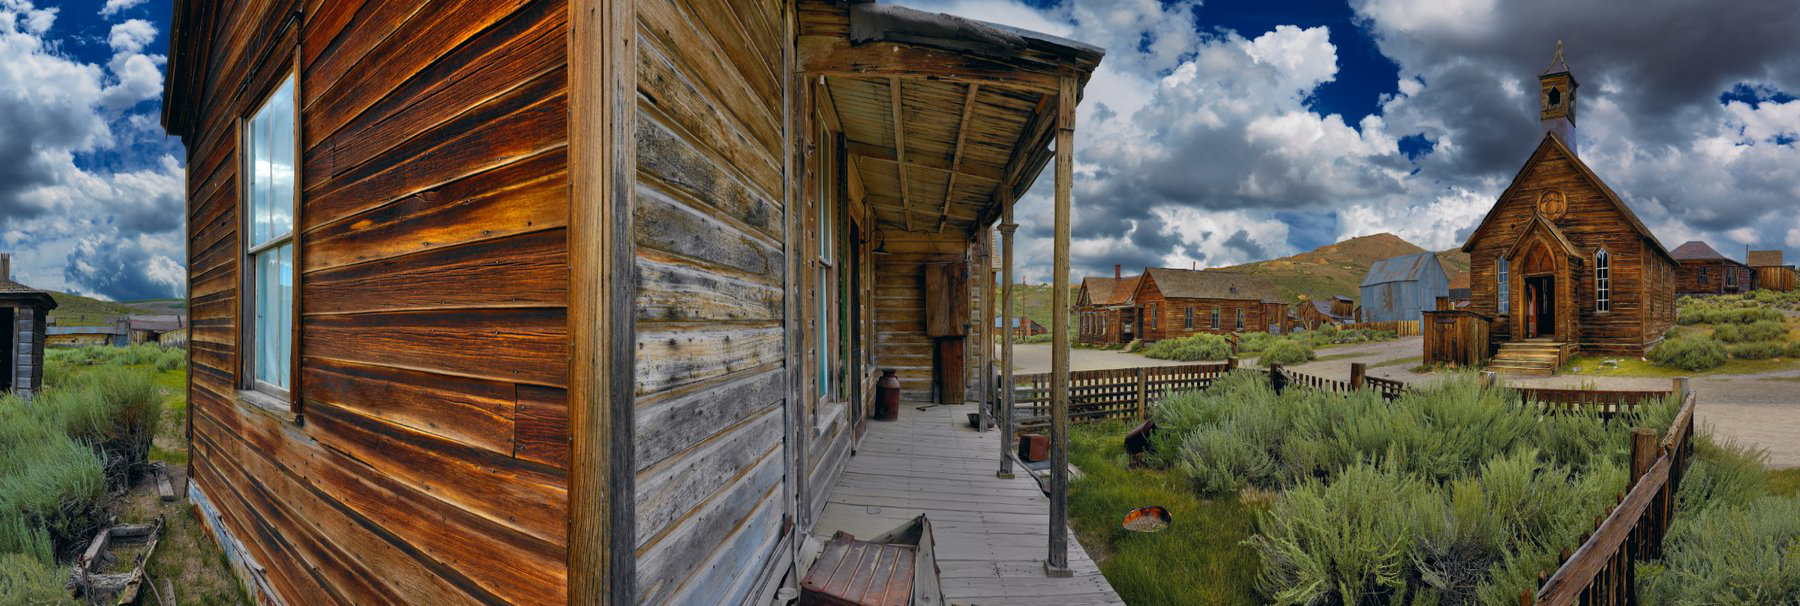

In [23]:
test_list[2]

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import json
import os
import urllib.request as ur
import argparse

searchterm = 'bananas' # will also be the name of the folder
url = "https://www.google.co.in/search?q="+searchterm+"&source=lnms&tbm=isch"
# NEED TO DOWNLOAD CHROMEDRIVER, insert path to chromedriver inside parentheses in following line
browser = webdriver.Chrome()
browser.get(url)
header={'User-Agent':"Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/43.0.2357.134 Safari/537.36"}
counter = 0
succounter = 0

if not os.path.exists(searchterm):
    os.mkdir(searchterm)

for _ in range(500):
    browser.execute_script("window.scrollBy(0,10000)")

for x in browser.find_elements_by_xpath('//div[contains(@class,"rg_meta")]'):
    counter = counter + 1
    print("Total Count:", counter)
    print("Succsessful Count:", succounter)
    print("URL:",json.loads(x.get_attribute('innerHTML'))["ou"])

    img = json.loads(x.get_attribute('innerHTML'))["ou"]
    imgtype = json.loads(x.get_attribute('innerHTML'))["ity"]
    try:
        req = urllib2.Request(img, headers={'User-Agent': header})
        raw_img = ur.urlopen(req).read()
        File = open(os.path.join(searchterm , searchterm + "_" + str(counter) + "." + imgtype), "wb")
        File.write(raw_img)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABkAAAAlbCAIAAAAxN5tBAAEAAElEQVR4nOz9Z7N1WXIeiD2ZudY2x1z/+vLV1WgDQwc0SQBEA6DnDEchxcRoJmIUoW/6BfopUugXaD5IGo1ohgDIEQlHgGgCaHSjfZev1197zDZrrUx9WPuce657q6rRIEBNZbxx33P33WebZTOffDKT/k//7QEAIso/mZkYRJRSWh8HFCthHj6Y2fonAF79YX2p9Vc2P9tKLh3JVyAi8PnJm5LPWV9q/cGQrj3fObd5u/ObGl97/uZD3vSnzXNijENzERGRqqaUUkpF6fKR9VfWJ5hZ/pn/NLzvxTZh5nw8pXTtfZnO+2JTVPXqKxARUSIiQ1JVZt7amt6+fXt3d/fk5DT06fj4dDZbTCfbL7/8ys72Xkpp2WtVVSwWY//4yUff//63d/e2/87P/+3nz58fHh7u7986O5svF31ZVu+8/d7p6Ww8OXDOOeeYXX4LIiKyGONoXEwm46ouRIwYREZEFISIyMwsAVBF16ZlY//sX/7m93+IosKtu/eePm+OT9P9l1+//9Jrt9Lvd+38YGfyD//+3/wHv/ozKXz09OE3tyrmhMK2tC0sUlmxFAvl5+waT7udVL0rzk5Ot1xpHf/e17/93vPH//R/8yslLUqqv/6t5f/4G+89Pqnv332wU7nHim99/Wv7E3lwZ8cVUoynPZXw4+fPns0On295HUnq+6UK9STK3kUURbFcLtu2qevaOWcxiQgRmUHEm9ly1sznSyKq67oe+RhjjDGEEGOsqqooihg0xnhdNzLphalx9fO1o+KqrM+/8oGAa6aAqq6nxuZXjOXyFezyBN+8YO7Wq8dV9dIRrF7jBc9/9S3yOnP1+E2icABACoAvnut9qUDbdm0XiAgsADoONdKtshgVvg1YglIhwr3TnqPGJNPtvRhOJ275v//HX9irFifNaV4ehYyZnXPeeyeFK0a+qF99/fPzRfiff/3/+/zw7Od+9m9/8cs/9eTZr330QfzN3/zgbIbX33rteLb49veesdvxFb70V+/dvl8/fzb7w//w3uKUbt3aPZ09rsrJzs7eycnp82endT3yrkjJqqqaz+ciRAzVCIpFIaNxVdf14dNnIqKKGBQg5wpTijESm3NcFL6qnfOUUtd2y67TiXsppFNzM19BfJH63Ucf8bvvzNT4wcvbvj7r4ul4BC+TxVkZGjeanDKziEjuNzIAbCqOGEacNwglKGAARNxmr+bvAEjJAJiSKlLSFC3GqIpv/rCYbvMrr062d6lrTlIIhYzESoISAmFJrGQwZY2VJme+uzKidD02zJJzrigKImrbdrmMR/3Ee++FLERLXcFUePYOZIlYq6ooR2VKcbaY91FFcPZ8Z+/Aj7dC0JOk8E4Qd7pl/f67z51z27vVeGrgxhcoCtd1HRmrWkpJVU2JiJgdkazG/+VBa5BhnMKUdPPhCcJS9H1slsE571wRg74f04cfLJsG4rdjqoxr8q6Nc+ii2HblyCNp6ImtgpUpMvNZfpi8WwHI+9RN84h6K0oeTcdB29npKUxQTNEIil24Xee3DM6UlJTYzBKRvHgCXpKPma5/ZnnRmvhp5GMXlj8v+Yu6749LXrgr/Xne9sdz3//MWx+EBAjM27DxBXAHRGJHJpYKMhaOJMtksxTmwnNB2h65icQa3e3tEt3y/beP3nprrxxvf/D4eBmLWZTHRy2PtmOfJtuMbClAUwqmqXC+rPzZ6RwAiRAk76QKNjONbdZpVzqS5fWn67qqqsqyzAcBZBW69qWZaezbZmmp25mODrZGHtFCK2xEZOBg1CZqo/WKW3b6+qs72zst66wiaPDNTLuQdm5t9TZfdNoGiEy9G/V9P5+fjcupyQIcDDCbGEqzAPSFFHEpcdHubPObr5V13YSmEbCrCOSOTrsAiB8FNSFnGmPflILtrVpYiY2ZutCLyJmOrIUuWBrvVRwF8FmQEApERgTmSxSuGI/HSMuisqa8rcs7/dn2D9/+dhMfzRUffoDdrZ3XX63eeP3Z7jR5RbN844+/1bz99NHWS25BX3r7u9+CxZfvb7m0oJheuzd56c5uOz8uBEnbW7e365GbzY/Kka/q4vlhijFq7PZ2twHtmqauxjGi71IMWHZ9UpXCGymgvixUz+2R8z3L2HuPK/aUmRWUTSpSMMAGyTpeDBpTD0CEiNUsEZmIxBidp8KT80YcHSsznJCZCQhkDPMFOU+AajJfjuazdtlq36Iqt/f2Hjx8+Oi3fuv4K18Z3793+/jkmcZuPK5j3xWlq8uqHNHR0VnXRl+MYKKqIDMLoGBQIlRF3TahKran47133/ngOx+1dV2UZYmVDUV5mF3Qt3X1AWab68z5nk7CGPQZBTjv+CmlL9/pqwp1bcIxBVjMbVQkU3EgifAcjM7OUh+4qne0OuJUNIuR+Si1Pny0/OhDR3xgHJpwFnsxm2hCSgtxVlXVHeGQ+sRJkWLovfiq2Daqnrf64Ww5MwtJK+fuj8Z1F7jtjp0HwMzCbDHFGIW4KlyMcW1iE5FxbgEtrFCNiSwZBbJAFIg7A1iWy/m4LG7tTML8SLrm5bt747Iow8NRXYzHpSsStDPtxcELAyA2YmYhZoDToDoyYDArYB6AcgeKIKSEqihDV4QeReGMFgl9UaG0X/ztr/3u+8dpfGfrqJl89CgBUuDs7l7z1kt+f0QTX7Ih6bKc9FKiOdn74PHRq2/g81+4FUKYzzqgquuxKk6OFx99ND87UY1iiNt7/OClvc+/umDDaDRyrljMm77vi6Iqy7IoitgHYouxn8/nfd8SIyXT6J1zvixS1MViEVRV0XU4OBjlt7YU1SKDADWzRLfhjkA9IuJyEvtS/FJGDRy2d9764z/W//C1Z2edSO2p4MWy/fBshn6r0OmtaX/v9uM7e9iuUQAFT026RD15eL8V2mrZhpTSSLxqStoZIlFiATMTJBqEi9BbH5NzTgltu4wx7dbY2S1HY88SQSGE1PdgEHEdA4dAXUwx9lGj8/BehNJ0jNGocORin5AiQVksWZ4kLkQ3m9PJibUtGxXMcxiZGZEQSZ4gCRARTRuojthqeYlERCRkpAl5Kg2be4pJQ0rBF1yWnhmq6i5BLZ96v1xN9TUcg4s2dgbCrorIoPheArCSXQ/QvOABPtXxH4uKS0QZIFs3WrYHPhZcWDfXtSfchPp9ElkDiJe+65wjIjNJFMysbbujo6O27W7dutV3MSUzoxjj8+fPAUwn2977GEPs+qJwDx48EKEP33/3n/2zf/FP/sk/qevxD3/4zufe/HzTdN/97vfeeuutx4+fPn5yuoGdMRF5753js9lJ26qZJq1Go6qqCl84ZsTVyWRkZiIMc0b2j//hL//b3/ra1/5wFh892r/1qnH/5PFHXdfd/tyYWd/76Mn/+D/9i6599k//4d98662f/fDdb9dsIJOqdeRK74yQdCI0ghFR3kQ5Tws2wJjZCTknhffBOSdCIsRs0PO96pJs7mGckV3m1aZ1k6KreYBlIO+mnr25c/XHZ4K9QPQqkJQBuGtlcztfy8Ujf15q/+Z8+fGalJeuZhcVk2ufZC3MLAIRWS16AqjZgFCrakKaHR+XVQ/g4Atf+MrR/J//y3/9p3/6jf39/ZdfeUND97nX+fs/fHR0+KTe3n39tQcfPlx0XffDH7zr/IM3Xv9Cag/+w+9+4/DwsBqLqnZds7U1TdGOj894JCv0SpgByjo9UrK+i0Ttzs7OfD7v+44gIpJSytpnCCGlFCOFYMQCsHMOiM3iLGkjAEeI81Vd3rlXiRt9/wfvnZykKaQoxylEgYzG0rvYtV1RFCKSTRGDiogTzqrdC9vwUoOnvDMxE0Awyyj/7Tvbz4+ePH/Wj8f7MC/MZVkiQaMRjIlBykQgT2AiS1en0mpBzn2Rn1NERKQooouwFJKSEzLjGAOBnBRgMnAflUNiJu89EJKp89q0C0iqxiKSUjTTUJT1nbt7H3zwMOq8Hu858aFvADVLBCZazfHzma4XH5CujsBrxhuGF8nbqIiJyP5k0jf6+GkbUijLaRu07ZZUiIH7Lhpb6bxzziKZqXOOSNaOk0uL0rUiIjGmtm1dIUU97tuAkOBKiBORvF0PILjZf/72/mfymfyvQsyMbAOzXjmrhJlhUAsayUKMflSVewd8dHL60tbedDptThvHMqolWJ+E+l6Z4b0XESJLEQpL8caFZb1p4qKqn6Grvu/NTESymnrhgVdfz78yE+ejBAAMYiYHkBKxMTPndzHnnCrYOZdUiBSDkwVENBgdakbDdcjyijY8/6DpMYuQCgQCKKBEuLS5MXN2w5oZzPKLMjNbk4hBTgmJIlOCGHmIBxwV9a1yMjJUqQ8n85jO2ndOP2xOn4eF6/v5qz+BV+7uFdvt8mSytfvG1vRzI380ex4+fK949GG3iFXR++gM5MqSJ5Mtp07bExHKDehESV3eL9bmmIhYiuwcM2enOxGF0BNJ1lhw3s4ENUsGgAACMcu6+1TToInlDZZgxgDIFJTbz0xzDynAhmSWzIyIhbPKROI4pjBsbhttnp+TDQalNZGCiBBzr3nPljK7wqbT6UsvHZdlEWNUjRlgyr1mZilp3uYYZBujToRttQsLe2bu+rhsOpFzhfzqGP7kVljmB5y3ZB7DZiIiwiImnKCmCjZisKplBcE2nLU3qQSZgJBtK4ZXRR88KKiqEhJWo9CgCaqaXbVmBgwGy1q7zUAVMyszG0SkKspRVZydnV3VsYcHI8ZFmggDOoB6ECGIIyECNIVP2Fw3teL5LRgrjYVBpqpM8Iy+TX1UYphRCAGmTGKmZVE4J8xGwxsoMwtrWfrXXq5efWVrMhkvFgvvdbno2zYul8u2SdvTnbqsPvrwadvp/fHk1u29soxIyuwy5s7ssk96Op32bUdsIbiu61QjCwGh9HXbtqltnXNlWVKKMcaUTESGIUwAsReXDfTTpZKBBCQE58iEvTgHczCjk5OTxWLhqh0WMiJmB3YgZoFzXPrSu04YZOycSxTYgbwQxLmC2ZqmGdX+2lEkInlJzTMlaSAiEZQl8loOWi+5GVLMELZtDksicg4iyJtGHr1gGkYK5TFDWe/OaAAzmw6TIqvEzKy2ViOvsZQvbwTru2+csNavN93j+e/D+RtX0fWl8wXXv34qkzKf/2lxmU9y2U95uxcxPl5w/Usf8nJ5qXfzrvbidfASVW3z65s7/bUP8wK5aQlew2VMThH7vj85iWdns+3tbYCn07H3/uTk7PT0JKUUY9w9uG9I2iHGWI9Gr7/yqob4rW9/8zd/87d/8id/8vXX3nz48OF0uv3WW289efLk9u2DRRNTSiF2IbD33nuvGkMgZk4pNU1jSMxwjr33mQTAzIaEtHpfz2De2b311a/+AuQPv/aHT54/++Dg1isi/PjhOw8nu9NJPdm+/fjZ0//PP/vdQop/8MtfuX//p4+e/rCLx7DFuBS4umssRT+mbaETMmHzAs/mCEbkBWJK4lze6dlRZn7oahu+3JIXx/Z64m0AWNf37/lOcrFTLgt/6v79tEJXoJ+PnbDXf+W6E3B5iKY1InZxAF5Fyq7Bzm56GGysbleXuU8BbF1Hv8LKFr/6RptraFaPrk7zPIyzV5kNZjBjVSVDAJRBpm2z+OiD99+889Lnv/I3fvb54X/82h//zu/81j+a/vQr9193P/ugaX/37Q8+kIp3d+6qVs9PTp4/Pkz6ztb4lZfvv774Mj748Aez5bO6wnK5nE79/sGuGc1mixhjNh6ImJgAToqUUtdpSun2wV4Ioe9jDGoWmR2vVsJhy8++1sJ5V3unbddDCeZix6om03685aTE6UyePl2kNLp165ZqiGirUe95kYKYWYyRM1Qssgmdn7ctgYxWm8Wlpr/EpTURJjJTMbPb9+oQ+eQkFh8d3761XZfONJgG4gSLRiLkiIiMCMasN/hHhm4CslKb8q9lWZZR+r7XZBBHbMGUlJLCiZilGLXve+/Fe09EIXT12Jp2aUuUVe0LF7VX7Ysy7e6XpzN3dBiPj2b37u8prG3nVeUYUB1QOaOsOSogRHaRqLge2OfPvLm4EJGpSW5hQYpZC0ftinu3Dprl82eHLXwv4hEDkTdXICyDqRsVReHVADPmRDwwkTMPa7jRxh50aR4xcx/6pokTNxpVdR8NbULpfFEQia7sPYDMCEb4dASsz+Qz+Uz+k8mGrrJSVimr+HkWm0n2CsBSSl3fLzo3qSf7d+6+/YOHdzVtb0/nXbCetuFOlx0TNR2cFxFh75kLAlQ1pIQVYkIggwLM0LSGdVZ8zwFcYHbOZVq6qnrv16EMRJTNciIiGqIZTM0xEyIbgiUCM7F3LEZorlHCM6bDYOZVRIcag5wIMxuxMUBMxkmJiaFmSZGdT0nVJKUUE1IKpd9c4M4XaxEhhPxSayWbmU1bMIgVogaKYlKw+ZrryfNZWpz401m/bJbL5XJ2NhfgOcb9QiSlaozqYOvW63dmGp+8P3l65E+fzfqTo6Mnh3Otga29B/dGW3b0tAPEee98UVhUdRCo9b5gIitJHJOqigiRaAIxcmtnwkLer0MIhXfZq0HERMQkg+GZBpBrZcAP/dK2YW1AAiDICgFUgFP2XnEygykBSqREMCRDApiFxYlzA8RDZMxMpEQEUoBFhExVB1dWRh+UOKaYUkBiM+77frlcMtO9e3VVVV3XmJkTsqTEljHQEPqMJTFz0mG3GpgaJGZJzZzzIr5pmsXCnHNrbmB+mCuW4zn96kUzLbO3KM8CXtn/mxPwAgyUdcy1gm22nh033oKZzTIiYkQ2tCPYzIiFMEya9URb3yq78/OlnXObCnPW5fr+RkV6Ba5RhsBoQB4ZamQQ5sL76MUCSJOlNcxw+VKZ13ZtM65OHbR0zQg156ANdcykRmYscILTZdv15hwUrusClODUUizLqnTiOBqSqa2UGRDZ3v52Vfn52cnsbLFsbX4WVGGGqir2dvZPj+NyriDs7o33D7Y8HYfUZY0x96mIFEWRreMcXxVjVFVxTtUUulz2CkynVBQlm4sxioSLAM0A8BCRaQ8yUZA5YzZRZiWCSNks9ej4LMY0qRwKF4z6voF5gJygrKSqqrLomABlImMm58smhJPjU7JYFJU4voInrAePS1HNTISYQdHMkvd+XHPlCyJNqga1FcgVk2oiVSM1M2MakK+ygPNwBEOe5gSYGmAghhknRYwZwCIiIXAeDEQMEDGr6noQrMCmgbeRZ9CgJ9v6BMuQKzag7fU7ugtvu1Kwr8ajXbToLpiv+ch6rtIVJGW9HGyqy+vzL20/P0YCyvVz8oYQvJsXDts8I3dY/tVM08ovsTYJmGQ9cNYvu36eFzzqxx75JHLpjgBCCDwICXm1mKffBx98MKon29vb0+lURA5xvFjMu64VV2xtbW1PpstmfnZ8OhrVr7zy2u7u/u/93u/9u3/7O7/6q786nW4fHh6+/PIrW1tbi8Xi/v27x8fHR0dHISRQ5TyraQyxLEvVqKox6Hy+TCmFkIrCFVKQGfJyq2qWDU07OX52cLD3j/7+L9X1137n3789O324d/BAQ/3dHzx98GD/p770+sH+7e9885v/1//bv33+tP1v/re/snvrtflZN5s9TF0fbSvFicVR347regZzgLAxgxXMECJBMhMiMIAETaZB+2gEjLAxntdNZwNt4bw7Bl0KNx7Z7AJAic79V5fW7h+tcz+t0BXrlM69Q3YJSDIzkBL4milzGdIyXENX+hhkauOVL1ryn/IVrv7pyvUvyg03uLSLYwPgP78gnQNzl9BqrAaAQEAKCCyaWkIyM2P4olLIhx++H9V+4md//hf//q8g6b/+X77+m7/xB3/v77/8xquvPXn2eNE9fXK86Pqn9+594fDkpPL++Gn4g9//5hd/onz99TeNln/09WdMXV3Xi8VsNJrcvXtb9fHx8exgf7/rugFJAAiiFlOylMJ8Pq+qkYg/OjzpulRVWasLzjk1VbXQpwyyl1UhUtTjTjoKsQw99V0kWtSTlh1ef2u77Z+fPO9PxcbTyhAQTlnSzs5B0zRt2xLRqCrLsjAzDT0TAMOg/GV1LW9LNzkG8vm20ncJbDCr6+7V126/+8PHjx/1k5rG1bhpDwmtOCUomwMkW0nECktIF0fdRghevuxalcwkrEkljaHvk0ZlZld4mLYx1lKAlMz6kIioKFzhPEFZYlSkiGYBUyY4Fk02A9rX37ib0ofPn4eDA4yn065bMDMURMaMtRabRw2R5JF/YYm2vCyseJcbqwQzh5hUk+OiKIreollKCf2yqYrR/vb07ORZ25xwMfWlBA3sRZND1L5PIsokYNXUOxl4B1lVtRXfYR3CfGkeZXtFu74v4rioSld21JOIcy47eLNKQUNk8Y39+5l8Jp/JXwK5HLk8rEerzSOGUIjAs4GD2qLpu4mNqxEXODk7O7g13tvdwunSLATpetMWlSWkEKKI9+JdGUIIsRsUYONN1YChWCEg66UwK6Nr45BWcYXZMsmouOngJB7MFU3swEqGxESs5lgBSrxaTi2pQqGWUkqWkg1eK6Yc0q4W1RJgbFDOiyyBKKMmipz6QIYtyUwtxgQoKqJLtkFOksDM2aa3TOeilZJNmR4WEpspWNR8YcXkWz84+eCJnbV9H6WPKmDYdFRP4F+tJgWrduG9b33n9J1H7z191rUn20V87pqTCrPS4e6+v/3GHu34hycfHp9GwAE8ny9H0lbMzOhjVzsiWJGD4TMIpZZSQiKz5AtPRCArfMGrRoumw4sQM7PCUlLSwdkjIIGRKRNnoBOb5g+G7cMkk/tgmnexCCIzEkcG0mRGpoAwkagRcnQaUbbAwbTGRDLvI+Vdco15rhpZDUgxLOcz5+vJZFx4WSznzOQ9q0ZhdsxE1IaQx9haNbeBF08syPuvL0oit2zOugBXu7VtbDhP27IpN6juF6IlMmjCA1x6jiJlt5GqZZNXNZv7iWQ1CokysGUGs3Tp9uvbiYgl6jSE0KlCLTlPmVbD5CDGxiSc7ee0Vlczl2Z1URt496vlIKaUUhvarklVVV0c5Cu37pUdngwgTUkZWghX3gXhnpQQhT7eOb0xhPIjrRtzQIqzp1kYKUWGEIshQpMQhHB4OusCuBaD9KHPXj+zVJXeiUGTao5Ys5yegiiY4uRkNl8u+w6aEDpMJxV7V5VjTd3jRx/OZ7j3Ena2S+9C7DSElFIXg4YQVkORZ7NZ7AOoSmmA3WGkipA61cxHN8N5ooZzq485J/AZAgIgrGZMMFKNppa0R4Ln0ZPHs2YZRqPKOSiDlE5nS1DFUO9SVXJdlk5q1mjGKSVxcM4tjrv33gbR7OVXMBpXFhWkMB0y9hCIsn0CVVVLDA8gaSCz0ov3TKzQmDTk3mACidM+4/k59xERQYidUFEMwXOWolkC9Lwzjc04xhTDOUi1BkDzHN+0oa61NNdjPm9PZgakDD3TOXtgZaMxzuPg1mMv32M1c67JrLR5p5se4gVfwRU+xfpPg3n8aeQFD/Bpn+0F8kkQh5vOudbM3uxF2oD8fmRo45JBvnEjyv+yc4Ashzf3T58+HY8Xqrq3R+Px2Dl3dHR0fHz6wYfvHhwc3Lt3v6qqvu9ns/lkvHWwf+cXfv6XvvGNb/z6r//G3/t7f+/ll195//33Xn31VTN1fppSbJplSosY+74n78sM8+e1MsbQtSGEEKPWdS1jIUduCH3Oak1kcFnK6fHT3b37//gf/VJRFL/7u9958tE7O7uTdj559GxR/PDJ66/c2d5/9b0fvPcv/9XXuq77r/93f3N3d39v3J0df9jGUBZepA7BaohABASwZPomSEiIhNmJeEjGsJJxTDckXMP5xFtvBJv4xTXhgWsVDTifFESUJ/kawDo3X0lvSsf2Y5QXztDrICfSdYqrFwFG10/TrCvTlYNXX3Pj4A2A8obY5oeMuX8i6Or66ysBq5ZXvi6Ucu3IIqL1zdcjYRWYBlU100yihaWBzKWW8phu0vb2vll89+0fFkX1+s/97b/1N//a0eGTP/2Pj/9w5+tf/DJefXBnGd7ov/Ht56ez+dmzvZ3pDu989PDht/7k6cMPfuuNN18r6/i5z9394P3HznHXhZOTo+J2cffubRHputZgasbGyOi5OkMys5OTs4ODoq7G02lSPYsxKg1UdiQks5RS6InZmNUcs/TEApCpU7UYNKagFEaT3TfeuP3DuDh8/iymye4BUYBjlGUdg/bcp5RCCCyDS8RM15NmGCzXjq6VrBisaoBpnjsEIMSjut65e/fgycPTZ0/nSJhMhb0zyzF6Eg2OBJwMQRGJ6osXHwZDjFGENj3/2WUyKtmhnFns+2DkiqJKZqHrRFVYiICkMaij6LxU4udY1CPXNVguQoo83S7Exa6fmdF4XN6+s9V1Z8+fn4jbqetpjEuXA/aVspmgQwjLubJLtMKIB73ywvhceyDzdFNV71EVJUFiTCF0zrxquzspuzvb7z057cMp11uIBghchRRTbz2FUUkGDaljHW2EVwwkrLUX6+o8MjUvrot937RFUQoxioLMCGpDNA3Z4FMTGAF/xqiBz+Qz+Ux+fEIKu44VOaw5BtCw/RnBLLQNlx6+FPGQsuni0XxpNN67tX90clqPJ3u7uzG1qe+tjAttW95KKcU+9CCh2nvPnGDMa2bHoAWdZ1q45L3Lp/V9n4NuzCwnCV0FEsrqW8yETMxBBoXIDGZqQjaEwZP5QjJRyAYetA0sqkwvYhPJCVrUUoKlGCM0qgCUoEHNVINZb5Q0eZA6EhFyzhVl4uyRyUrkBY1Hs25gK8rMuV2T13AwwOoCxNSZyujdh8+eHk/95F61u1VQ0NTHNiUum67lKD6VzfLg7LRL7tCQxvXi4EB2fHr5VjEe9eKXo1uzw65cvHeq7Q75SpHOTuep6ib7RVkVRApKZsEXlVkKfc+ezMhCijEZkhBAJiLeO00DnUFVaaA+AYAQB0XmvOXtwVRBlFTNzK/61zYEyAFEmtFAy6GHZoCJODNTkKoS25D1NgUy5N2RBY55FZ6JlWplwiACr3Rs55w4ot6cYyYxJNO+LBygKYWqEOepb5WYiE2EU5tW9C4yU6iBQGwxZhIWmZGIaMRy2RLAKwq5rUJC8qutGAk/hpweN2ngG8hSHkLrD2R0GTVjYj2PWlVmdmwCKLGasZGxEEWsKNL50sMkVCjYwEbU9z2tupiJREQNuMg+WT+emYHOTSFiyiACmUGjmToh7yiRsiaxVAgh3YhK3AAODv+vfh8GERmgIChTWjHoLSV6fjLrE6pi0iinlCAipM5T5V0hxgkMJR6ukiI7b2oxxd4L/AjLOUxRljUzUmgffvTk2RPs7uOll8qyTKqL1PcpJU1QDqqas1+JiKqKo/WYTMmISJhgPJ168Y7ZpZSUEGPq+1iU0UshIiwMEqipRjMrXA69c2aOYIY+9xpo/PDRc00ymo7a1EHUMGrbiAIMFD7VFXsvgsKUYBY0MJTZEVHoTRV939fjDNFvQgpD3+WMbKrKnNRMNRJBXLZWU0p9SNntCiIQiWrSgZMKNoAgjpxzznUCy+upqtIQ25EtOhcVMSCl83Q0q4WCMyiRVX09n19Zb18hyKszN7TltZKc8WVbA1h57XXrcZMRrHWyjPy1m4zDtTW7/nCJ2bX+cG0OrDVOufGGwxU0XZvc+keRHwFfu+k6Vz9sPv9Nk3Mt63dcL5EbeAdwZXrbZgd/MnM9WyZXAbLCV3kjBzg7N4iIyRE0hHB8fBxjPDg4mE6nwA6Rnc0Xh4fPUgq3b9+dTqddG7ouqC6n0+2f+7m/+bWv/Yd//7u//+Wf/OL9+/dns9OicOx4e2dKbMfHx2en87ZtzKwsy77vvffOOSI2iymi7yJTWLp+BIjzIqJsrFA1U5tOClVdLg4nW/u/9At/VSj89u/+8MP35q9+7ktHh8++9/aTk9Pwhbde+6tfeXD67If/r3/xR89P3/0v//Ff/bm/8YZzWyfPDmP0JAo06wYRMmIwmZAxwYtzzsg5JgcmMJlAvFhrlwbJCsG4qHKt9mymS12gAwEHwBBZc6GvV9qYXbJUAfynwbCGW10/F84Tq5/PaM6kGKwHKq4dgXwtD+ta+TgM62ZZ3/faifxJJnh+Wh6WRKUV8Z03fF1MZmDKL0SXUjld/5zZXaaqlrIum7/KhkSW131tmkVdj0OQ99/94fZkuvfSK3/3V7/aH/+7b//Jt2Zni5/6Gz9x79Ze+4VX3nnv+Hs/ePfV13+q6+10NCnL5vDZ/PDom7fu0F/7G19qmm6xWKSkzvvlcr61tXNwsPfkyZMYM2KWFx8REVUyWIppNpsRZDKZAnR8fBpiyO611YAUM8SgsBQF4zFYUulZqOp6xxZSb8a6CCd37r+aEs3mjxZNU7db42LEasvlUJ2g7/u2a/vQV1VZlt6SMiOpScamz9twDXpezAM1pJ/TzNsCLLMjY+xO2yf7e2/Wxf73v/32w/bZW5+/W5bUd60ZjIwMCcYaDWr5OqtLbl5fNTI7bCyJeWurXOKKk7qUgsHydh9zilczTw6cVDWExITSeQO8J42ubULfJ1NiBguI7PD48Xhy8OCl7Y8+PHX+6N79vbZdSpUnETA45HQA9YbJfhnkXT2eZRsAEIEqYXNlEKGycKqaUpzWxaxpRuOtl+7tLUP38LC1uGAqoSbskzFC1yN6JmEjxBxPQZSVj6FBrq54mxON2TlXxtQ3TeOLUSFFTBZjT+SFCs0EWjDAoM8ArM/kM/nLJtf5hIiu8zkR+pDMglA5KsVXXTc/W/Qi/mDv4PDw8Pj4cG9ve6uWWKMU44gl+b63vu/7vh3ix1nYeWZZaT6ZTmIEJUIO48JKZ85qas7jnr++BlMGO3kwvE0pp2FiIjIkA9jUYDwk4MlmmBTivHCmogixKoOHBDoAGORZonFKiaECiyEYp9Vi3Ktq0t4MfZ9IE0WoIqWomoggLLiILIBSxgc31bwh2Q1gZmKAkmptAEiTi8Yc1deTl103kWo/QGeLw76bxSYhCo+fUy+st/bGe6PR7XprZ7Ibt6Y0ljiyfrduTNFEoH8Sz+7PHzugLAsRbvo4GwNVVda1L1xA6syicwxNMfVVWRNRStAUmEEMVS0KJyJt0+YUlqo5DYJPKdDAKYOACMQryM5WeSR9WdoKnMz2a0adkmYLOXcdwXIKlUGBZMImBU81gZTI5QwMRDGnwgUPgAgPpLnMZTMAMfYpWUwgM86FA2LnnIsJoOScB5QFReGIjMjWHhoAasmgnNVyDDamGim46cNs0YoHiRARSE0v2HHZDXVJu1zjlRdlw7JDgvGGYkZEkmmAwgKLpCAigURNNJwIZIR0w6jcBCCIDKSqkRmVLyKXSGZoQSnnw9aVxjqAW6oJyYxzX11+1pUQ4FlERDxnDzuuU7PzqXrxMBHxwKFPYipkDBNWJ7g+pcMGSEFERHrdUqRYK0YGNZiBOQEuJ1plor4Lx2dNgpCv+05TMmZiCtPaV46FEysY5pwIGEYhGaNj0tG4dL4wdZbaxaxfzOa7e9OzxaJrcesO7t/b3r81dhxMk6YhRZqqMrtcaAKAc84JAchp+1S16zpVY0JRFL4sAHSdZZZITGE+b1IRqqoqnLBgHSBdeDJzmtggSsqSxEGKSeyKZ09atYKZY2wYrm1bhtdE3sdxLeOavYOpwFQExK1aSOYn452XX27aJglx28xrP4HpqqlBBAUT8RqHMTOkmBVNL8ycDKaakGDD+YMRq5a9AgqoI/JMhWOfSy2kVZTgqveYC4PEYKHXFBU2ZF9dDXFb/UprYxpkF9l961jLazmPw0vl0GPNRFEilyFPogtwiao6x5dMgg1Ve/j108JDm9jNp/rii6/5qY7fJDc90rXo1fr81bAcjqjqGh3cuGZevnXjCpeAwgvXz/19qWs/9vk3Aa9LFwRygStdLYgigtFoZGYhdqdnEaRqsaqqvf0d733btkeHz2KfXnrp5aIYmQUimc8atfTVr/7Kb/zGr33ta1/7lV/5ZTPrQ1uoK53s72wXwo54NpvFGDpNzrnUA0mJqBAPgBR90yUNOhkxT4pSmDhzHY0shHZ/b3I6a06OHm1vHfydX/hrTuLv/M57nS3Ii6smh2f9ex+e/uQXXt6799rJ/Mlv/NvjGP+gWfCXPv9yPd5tZ4dNmtWlDA4MzkH4iRhESWDC7IhhQ6LHZGqEzMa6qT0zcYFWebIv9ReANbpBG2iO2UBfH764UZRgM2vmqpP+vDAsugIx3zzv9EUY1rkrlTevQETX+qZuvsXVk1/EvboKXa22+uvf7hPI5dvRyp+0+tUITESwdDWTnYgIzCDMQ4DD8C0FoJwTYdGwpDOoqHyznBPR1ng8b9p33v4+M3bu3fvbX/m5//lf/at3f/h2Ufd797bv37pFVB8+f/v4+QdFvbe/t81cAMXhyeHTZ2ff/Ma3v/DFNx89Sk3TOMcx9WdnJ2VZ7x/sHj4/Xoe4DiAdO1UtvG+Wnenp9vZOXdchpKZpVIeqlwQhViJSpRBijKmuwQxXwSVSUEwS+8LYWEKMJ3u36c2f4IcP9Wx+BuwUfHvevzcajapyJCKqMfQxxt57gZmqMbOaMTbHxvWwqRnbQOohoqzlMgCnUIZpM6p29/d3T04PD5+fiB+xK9mybyPRKmf+lUwL57dYL8ub66qqInVOZFR6VV10ses6QwZ7OKbEpuyYYTEmB9NsGVlicXVdqGK5XCrMFaymIaIq2+2d8Wx21nVhdtaJjFVn55sCZ3X+HMMypdXavjnrbT2S1pkgjNI61gYGZvKOhRHbpoCx9qXHnYNxQDqexxDBXFgSgEEOKYW+54Kq2vXhPDynLMtcB+pq/ODmPFJV5xyYYhdhvbhaNabQiytJkrAbKPqga0h2n8ln8pn8xct1DjOcw1iUPxABFkNoWyq9c65IJE1vVTRlV02mJ2ezk+Nnu1tjTF3oHIXuJBgbW0IIoWuWzOy9L3ylqkRQRDMGEq3uvjaYc04lADmFhXNONScc9Mycf81Wlq6j1TjbYAQ1pGSkjFyclZIqJTOLmXc8vCyt0icJDbwsJRaIAiBllIUL5sE9SQJBzVtyyVJSNcCpwJHzDCCkmALgkiNetdMFH4xqXOeGz1uMJoOpqE9aWaqgZpKMopr1JrOlnp1F7uZRjtv2vaLAZFx5Ht++C6epxuNpoXVRlpM42kpAzy1cA7GK0DiPQrafzieLkwkKhhHAhSvrWr0XUGIxMiWN3iEENTPHAiYgEZnzuY5TKl1lhqZpmIuYYGYszMwxGqmJY5CqMRMbseWk+ZQsmwdDhnbLVDRbxcqlYVNmMh4CP0EgpBjztpdpPiLeLGXjb/WPOGNLdK5SkpgIFd47J4ZIZCEMGYuAlNVp1cQMM2Q9XzV6L3VZqeaxl6GxYbs3M2YSFoUxs7A3JTMsls18gbp2ymsb+5IMBvPNCu16ogErmC4DSFmjzmwRs2RDkrTMbQGR0AARAGYYQr0sZ4kCXe8XTimXcSSGU9KkrBY0qXGVw+iGcTioEhuqkZESDJxZgUMZA1Wsco1Z0owmX/eal0IIOR9gwDkXumXqO02BTT3DEzxdTPa+WaVxAFQ2QY/N9lsVWyAM2ZUUMAjBLAIqUhCoXYZ5H8lXRGXTzJPCF+aQdrZqYYhqVt1zhqwE9F00NKOpL70LsY0Bla8nI6QYU0pq8fYd2pruj0YjVwTnek0KcK5Q0XUdEdafzZJI2TTNbDbLVCZVOMeqqeuDwjJdQwkZHV4ul46icz0jYz6c63sSRVOxRCmaWk8uine+GD99Ek5OkJSV+7Is4f3xw+OiqEKKlbdRLXUthWMKRCTOK1gV6LquKLbu3d1dLLo+HoMsUw5Xg2rwmebBlhdGQInJOXhB4eA8i5AaKA1IvSosKcA5DjODtkwQhmOWnDAxw9+WxzMZCYFVRdNQTJxIbPCGUoauVnp4HuOXh/ja2FLNZ9qKPTXUOlDNg2TIH72CwDaSuF+cq9falteGCA1fvDEHVl70V3M3ryxEUFsFUa9xAeMfIQPWjwvA+rRy1QbItAtmt9FbwEULfBP82jxy9Wk/Lcx3FWi79JxszGK5fCqG6ipIajHG09NTM93b25tMJqNxWZSubZ8fHj0rinJ7a9e5ypc1U4oxPnz4+Bd/8Ze+891v/tqv/drP/MxPvfHmax9+8CTnbh9PaiJyjk9PZ03TVFWVUgpBcxl7ZhdCCKHXPjBz5QtxZQ4jhJlqIkqz+dGoGjsqZ4tnk8nOz/+tnz7Yq/8v/8N3mHD34JXY8re+9/ZiefrXfubVl9/8ybPj93//a2ePH/72f/tf/xe/9AtfJrijk+8511scJVYlUo6gnEo6gaJZzDHoKVkfNUZNyfRmZHDlBdJruxIrfOrSt851qev6AkDOCH6x5/4T87A+4anrt1hjWxe4SDQwv6+0QH79T58k61q5CmPd+Lw3z/c1R2fzDGIbKFcXcorfiKmJCJuyrV0pw1dW6QINBDak1Vadt7G+7ep6XBd+MTt++NH7o7p48PKtt956+T/84Q++990P30Bz/7VXd7e2vvzlN3/7d7/z6q2DPrnDw+XBra1XXvvSn3zzm0+fzc3s5ZcfPHr05Nmzo7oqiahtbW/v4OTkhJKkNKTNzEWFADjnQ4jLZSsy397e3tnZIaLT01PnHFPOV+oAmGYeDdolROCrINxTp4jMqTb4yRadnT6d7rrPfXES0tn3vg0LYVxsJbZMny7LEtBWmhyXQZSzYQzYxscu5Kpx6De2VYJIJiIfsbWz+/zJceybV155QB+Eh4+Oy8rt3xobLxkJiICRGamogm7MaXiBi3q+SseOqHTe1ebbPi7bYEy+rI1IDUGTR0EEjTGRpaTlqGybSJRG47rr+mXTJsNuWXZdt70tMSzN7O693adPTo8OT19++dWgQzWf1SjJGp0OxSJWnuDBS2GrdO9Y7+HDypzDLJhZNZnlKookQmdHp3sHWzF2y2Y+rUf3bm/14WTZdqBCDQTPIppS33eF93UxCjFnMbBcTIeZU0oxBOf9TV2TUirLkoRjn2JIxJHhUmxJCgdP7JDyc16jiHwmn8ln8pdTVrt/5rZkZhMcIcbYddbXJXsHlJFCIt/0GG/vHR3Ojk8O7+yNeVT06LoCEnp2pk5jSBq70GVmp5hZguk5yRRr23TTqZ5/ppTquu66rus6AEVR5Dq5MUZFxk3O+RrrixgMpAxJyKY/TC1qTLFPIUKhWEEFmbKhzMxIyFVVWMiRK3kEVpWG2ZlWmjipJUt1MRIbWcBkEsvKiCmsFPBrVYu11UIbeYVVVWzKqST1sJCNrQTTZE+ePGvCrd1RubUN7NDu1HZGlbdib4qdCaZFKalt2yOV6By6BqWNJO6XwRs9jrak4CwQo4BqDEksuZrrUmAhBDWnTAa2dRgMM5MwEQnBs7CpGUQkhNT0fVV6rKyPnLcovwwbBuiKZcjKb0KIBI1pU03K3CoFkLM2kdEqHo7ZAFAfV8xcBuf6kJk+jS5vd0I56ep5lxGBiYedzpEqAyi8B9Q0wTyxI7IUzTkJsRMyQE2jeF8Urm3XRQmJ1vGDauSYmJlE2JHzHJEUy7Zfdqgmnjays+XxZmZmm1WJ1obYJVbBBdmMyMFqMyeyGGOKkiKENCVYApkSVFXZhlTY6xsxX9ZmBswHUFVGUlXTXDs+DZm9hAhE7JA9Xiuuz9Xhmj9kb1ZWtrw4Zo5Jrw2Tul5syMntRZpV8C8RRMBC0Nzp5+HD18mmR3/9ntkUy3Ut6byUHMNSBCDiCRz6posmZZWo6HuFqpAKhVE9YutN1WJgD2JvgCbqe4iD90Jsp6dd6LG7devWrUnTLE+Ojo1w+9Z0PBqdnZ15jeOpi3FBNs7JUrGaIKradQ1yavPY59hnZm9mo9GoacJs1oS4nEwmIqI6ICF1TZUvvHfCwjyQSc0oxZACUiRNUPQsYGah0dHRctmAPKvaeDIOKE5nbV2NfWoLp3WBqiBhT2YMcg5KKRpCiEAqSh9CAMiXPnV6gTBnvIGxci4yyqZe4Dx5R16IhDgxc8b0YUPpgyHMnDJSTCCC8Cqr7Oq6lCmWJkSFKiVNSTnZUMAplxrHmisAMWSA/EVxtfmx13DXSpFW2HpHGBZfs1UI4RqBIiIRys78je/bel3Ixzf3pHXSss3nWM8i3TBBNx96k8pxE4hz6YLXflC9fu6tgZsXt9TVv156mJuAoexEyvaArkucMqcUNxvz0tttNgLReXrdS+evudY3PfbmZdd757Xvu5kFJkUo5yIj5pwLoQOZ9z6leHycCR1pZ2srRaO7t05PFs+ePT07nd+5c280GuV5W9d127b3799XTY8ePTo5OfnKV/7Wo0ePQuhFHLHtH+yORqN3331/NjutqpH3HoYQUi696b1PoPls2bbt1ni0sz2pR6UIxxhTSoVjQvIFjVSW80Mi+dJPvPLf/HeT3/udb3z32+/fPzj4/Bc+/73v/unzwyf/9J989Se++Nofz//91791qP/Db5ydnX31q59/8NoXnj9/e9E1KJwSJQtwVLmSvS6WPUiFAFUzlGVd+GgkCinLMqUkUoYQ2FFRFItl793oPOteLp/BvEqNNAyb3O/eD1VL19jFpjaTUsiViNddLCLOcboUKJ63Lbswj+wiV/GmPemmWXMRa9sMbLwWRbJNfOraeQogKxn5tI1N/QJcNTzPQNa8cnyVxPoF77Up1731ar6vEXI6/3lVcqggka1PufxGw4qZA9mgqis+9lAEmplhmjTl4TOkvqKhVYWyzpCfh3O6QTPr+54ZScPZybFzRVG4dnn2g+99Z7e+/dIr+/t36t//j9/41rcOx9O9z3/ppz73E5M+ht/6nR/s3drxZYo6Pzxq3njtFZFH3/nOD37+578C4OnTI2KUpV8smuPjwzfffO3Jk2fvv//EO7p9++5stjg7O9vZ3m2aM2YnYn3fz2azqqrqumbmrutijH0ITC47i1KyEELooQU4BqaF9wXMJQUMx4enrka7jKCzN9+cUArvfq//wfff/cJPl03fKel0XOckJin2OeFU9vSmlJJZkWOEdVifB+on27qlMsAHIO9wMEopqqojzI9PC+9KZ21/tLVdh9S///6sj939+1tBT0MXd3dFIzezMCqnav3aKFp5XJmZi6KwlQ82n5BzrGjfpHZJvnC+2t6ZUtEtmj4nITZLMVqP3hXiyjKGcHa6rPyoKAoAKYWS4HwRQnj+rNvdrZwj1bbvFsI6GrvTPr7z9oevf65s29Z7zyJd15VlWdTFbDYjymGna4JtXujXE1xXpRGGZZyZyDimkPVqVWLhnd2tND9ezM7Is69LUBx7d//OznhKHz08TTEZnPqi8KLmlst2vji7dfuNtm3zPrVYLEQk553ZVNw3Z4SaEXMfgpk57xMo9sEQyXNsZ5FTOXKFH4eoMQbkrGH//ygvXpeuyqfyNr34xj+e63wm/yuV83TIF4QoR7sTs2pgNmanRmqxLEtjms0WXejH4xFT8fzolBmTAge3p88PZ0/Gj1556U5cnuxtyY5y2wc4aIEQNfZNl8OyVCHnsXU5kDyl5HLNwtVqn8lWAEIIIpJ15r7vc5qb/CddRRTmyJcQY+Ukha5wICClAAiz8+CokQlVVTofmgXE4FZ6ddd1xsrMlmLX9gXXzkkMXV1uGZESNEWzQPBOyJGzFGLqNKDvU9dpPaKyNFNyzhkRM5Cyi9pEmIyJBDHTXgZbIJPIQsteinnfOUdRgxpGo9FH7zx3MIfAOru/L/v7O7XMxhwqqeq0LSFISGLNmDQRUo8Rwxk0MHPZRNu7O1q45Xfe+yNgH7IFDYTIlApfjsbO8wJQpgQmYlvbI5rQNr1zbmdnZzY7VdWiKBaLpqrKqqzPTpcxRqZQVZUTDqGDhcKLUgnkXJmW7VdmJ0LZnso1yYCcsh1mJuxzGnwzFQgziXNZ1Z/NZlJ4733TtixS13Xb5Aq/4oXMEswyZYgM4il0SmLeFdnMVI0xJTOejMamrSbftXE2W45HU3EUk7HkcopclmXSwIK+aVXVuQJAipE5Ax+mq1CmpmlGo53ZvD88Wo4npLbCdC8khDF/0buzYQIO28IKrTtf9VfgFwHZIT2Ye6pK5PKZIjlDkHqfKzyCWHMp6Qz7pZSYLmwBeTCzkwTSpMl6iwVl9zmbgEOKSuqVRVREvPMCjsH6dsk5pYVG5tI5Z10fY3SVXz/00KdJN5SxC7cm4gE1wCpPWUadGCEEIhJmpJRChwRLMW1Yo3kRICGitcUKGiJDM+8sVwlcIRWwIVkoGKbek5mmpFlHIvZO6g8fnbQx3b2zfzLvF00gz21zVo6xu1UUvNTYOzJNVlUuQh4+O4YrX3l1PN0qXBHNMJ9hVAYmPjo6Hk+pHonzCHE5nhTiuWtOFWlcCMB9H0W8c+y9r+u679t1i61ipxBjSsmYMR6XIUazxOxTaJumE5GqqtiQUspo7SooRyin0ApcVUWvfZ+SkT89029/+8l0Ol2q39rbXoTuh++/V49GMaZJkXYncrDnRyNw6NiRI4S4dCUKAVEZY1q2J5qC80ZkRelSSilFs6QkwqyqmvU6GBFpSBGpqmgyrspKDKFr+mTJDF0LYnjnU3JFUcKQQpvMnPCo9nUlxMliMgMbSHLRC4qqplxWxenZ8uRk2XUE5OmjXtaJ8wjQVXVIMhqA1BXv7xwA4Q1O1XpK5iz4nllcLsrBRM6gZnb57Os4CENQ5KY5vTnKr5z/iU64FPK2Pi3dANx82ut/8q9fMvU/+RcvnZx37pwuV4eiqrTGrT75M7z4SdYhaXaFz/WpZPV1IcrQcpzPz0LoCudG9WR/Z3dUjE5O5k0X8+a3t3dghL7riGwymbz22mvs3fHx4Z/8yZ/s7u4WRUFE29tby2VjSK+99srDh4/7vo0x1tWIGX3fAyiLWrN+ktC27ZlAVetRWXhPRCnElFrvy/HIO0GzbJvl4q/+lZc996Tf/ODd5wZ9/fU3F/P2//0//ftf/erfevWNv37v7tOHH/zJ//3/+evHsw/+/t/92QcPfpLdhyd926agQmAsl2dJm51dIUrr6DM2hgmRXFsE/pPAqTfTrFa4DF8zQq79+saNz2GszYv/2EyjQc69Hjed8XE3vcKlIrue93zN8T9rUswfab7rJ7ALL0Tprw4O0OQLvktEQ8Yn43PaGm8gj2yrnB5Gpscnj5u+Sau8mrFPTbNIrIXXooCT4CQ5F1jhnJTOn87x5MmT119/nYi+/e3vHh4dbk231PonTx8VRfXyy7ePj86Oj49Ho8mtW7eWiyajLVnVzkZCWZaTyahtl4AORaNBIQQzcs6FICBKQvCJXBAjRKdmo3KUEFKvgVE4PtjfWd7pnj9pF/N2a3uiqs2y292bLpd2NpsJAaA+oXRexJuZgpDMzuNqM4bFNmCgV1qeNFewZiuYYWSGFkpWVltbE+fcYj6bzbvpViEu9KGDeu/qrjfvz/1LtPKv5MRPdh0TlglmyGRMZqm8C1G166GRM48NCFGhJMTiq9CS92AXCH3mTJExGyz61CeoCcO7uDWdkNr8LD1/PtvfnwDWdX1Zlqp6dnaWC2IMD8NmA2vvMumPLFMP1pnpcuVtHcpjwQDb2Zksu7ZPkZOSiwXRuBBhH3bHs2U6WwRSE6rUyIy8q3O9SOdcNhFlJTf5b4zJzHjzMBmAqpAuJNWua8+cN/DYSaEvcEl/Jp/JZ/IXI+tJeVXNyBv3hplqWfEQI/RRuYu+EPajk9lyendve3S3W8weP13s7zTbe3vHh0/3pn62jEgRhgZYhtB2y2TwRZUJFQoeln66rEptrjZrt3f2+dk6oGkltCrsByRVdcxrKnUOO89EgVU2Jco0EMnsm3xrIkdgybl+2Em2nSNIKZcitFyVQkFIGpEilDSmlDQl07hOB7HWdi6Ty64KIZl1woEZQBCBmXVNy6QebcU8FuxIW3OsESvtkW6LRUFiJYXC5uY7EOCi1J1qQtGkkTtrw5mikeg4CgfHVpeu8GyhUxeZyNS8nJNtsXbhq8U+mNkQUjnAEfDel6U6WVOxLCd2zNvEutfMhizGFxyWm4iPZmaDkhJyMIUOwN6oqhXW9z0BXdN1Xa+qhbcVocOIhtT4GyykfF8FiDMb2bjv+9BFX5RV5aumxwCiKRGJg4gIn/toh0zbae2YSZQ5Q5wdjAJwH4MCxJJM5CJws/aPXlICP72szbTzQ+tYwo3hYhtvf/VGujonP5LREEiVmUqak2MZ5/QNxgbOShRMhC3EzHOXFZp2k/J8raG68rStnmFTkx+qQDAxizh2zgTMDEqbIYEXZfNNr4qt32hwkKsh52OCwQu4aIM0DcQXCknKphAhLjGduLK0ip3TRmDOQRxFJWXPXD94cP9s/myxWBQFRiMsl0umVNW+cOrYGIGMLAGSfOmKiii4Ztkul8t6VI3Hu0VRpJSWy2VKqSyG2s15meJ1CdRV+Oc6MDbD9LkEBK94D8OANGdGzGwcLSX2AFWLBmai5pOiD3HZa0hsYPZccqxLFEUURJgRHEhB0YY2Mx2ywXawAM0eUs28qaFPiS0ZMxNILa3K+Zkw3BA0kbJ+PiTLM0rJYh9y4i/VAEsp9Qxf+oJizi+46mYCwEasicwY5gBb2bC2VmVpI7nVJVornadazurk9aWfiECcizNgZUWuyBQb4/gCK2p10XOy0noOXJoJP4JVuYnvrC/+sbb65mtfus4lufkagyWQO/fafy/40/rfuo7T+t8qPJtpRcPZfIwXP+fVB37x+eseuZpL6/J12LJxePFwnoFuPXpyYfWzs7OHDx8enxyqptG4mkxGju1sdvzo8QdNMzMLRNZ1Xd/3o9H47t27d+7ce/fdd4+Pj6uqcs4tl8vRqL5375442t/fraoqxr7tmhgjrTIUpmSqpmp9r4t5M18u+y4mELPDQBtUInKOxYFYS8y//Natr/7iF15/Dcv5UQjdqNptQvVbv/PN0wVuv/TyeHf7u+/i//HPvv0vfv1P3nmXeXTHjQ7MjZqINioxSyHOsZBlGg6v5g8bybW+yhvG80b769XTNnthPUeIiBirCKFLU8Yud+2VAXNTn/6Y5Jr98ke/aS5NdjUp0TVpigasfePXa/5t5Eq48O/TP9mlka9sOmjCpDdd71I7XIcvX34XyhoZAJbVurq5uioZCHZ4+uxk9rwLZ+ThPVKytmnaZiZOxYFhsOA4sAvOpaJ0IeDRoychhFdeeeXOnVtECLGNKcxmpzH1Oztb063xfN4ul/OMShA8jPMWEmNs2zbGIMJ1XXnvaCgGdF6NLsYiRhcTqzKRie/FN+KaFFvtBYFD4zUU+7vjN9/cfuU1evQozmdLM2tD33VhPB7v7m7lpLkxaIxDcXQYx2S6KoGa22ztjbnUnusGBCkl74idEHMPXojvJ9Py4OBAEx0fLfpAVTmJihACCQPnlUNykIDIkKktpbT2+a9ZqCklYCiJlGJkaFn6unLeESzmOj9m1iftkyZy5IvQI0bNlkzODcLshItmGdsmEZz3AJkvaDodTab1fIa26TWRiCOSlM6dGasdev2+a8/kuaxwb1oPLRk+Zy9aqid1WXpimEakJKYjsa1S7t+e3t6rx6WytWbRzExZZNw0zdp6yT/zan/tykNERgCTEoxFc2kpKCERBScJ1iDOU1wKAlNahQx8Jp/JZ/KXSvSGz1fFciZoIkrJmq7vQyIpmt6a3kDO1+PjGZ4dnbhqLG60P5XdmqcVJiXVBTwnC13bLjM3YbWerQJwbI2DXF7wN7Wddfw4Vok4zAxMQ5J44jisYI6IwLI+2cwcC0PNEgPZdMyrfc7iDcARM8MJeceld4Bi4P4ow4SQ/13lpW9k/3lxUogLwtTClt435OZguIJNeT5rSJOgL6SfFrpd2o7DFmGsgcsZiiWoVyPoSNMU5o0B32M8i/Uhb8NG7nlnz1s0tE3aiAUvcVK7uhQyFbLSCXJasZigVpalEfq+z7k6QwhQ8t4Tiarm/TellFN/IGtWbKohhaFEXXZyOMe5ki+x+UKcz91kgKrG/C8HTwyJc1Q1xNh3sW0tRSSdn82Xs9Z7X5alxmRmQibZ4OcVkrXKB86MIWX/+QgBEXVd17Ypxuicq6qKiFRjzunuhXMZSiIitQzeMcPWCNbKaBX2+a9RrVm2piApbSPmwC5m/1iPghdMnBePhPWV1yEL60mw+vRJuBoGgG0oy0hDfalcIYFWk20ATYiNGcIkzIUXhplGwIihFjcxl5tkPbw/3ms+JNMQYwIzuyFk9ZO91IV7IqNUm+aDubx4KBAN4gpjP1umszlc4ZMhRotRAZ2Oi92tsi7MSXJMjhmEplnOl4uYwK52zrVte3bWMKOqJMbYNE2MQcTEmfMQB9XY970ZvCtHo0nb9oeHTbNsc/3B+fzs6OgIpGuW0BqL0SHf2bltSKscfENktVxYrFSV4EyZhM2iEnxBMfnDw64aH7hqJN610dpWQ5CgRoLKYzrmUQlYJEtMiTgakLmLmkRVoQ24I6iZWBoW87wSrqdA5jrltLmU10OBHxJ2567Ptc0YYFW0bZ+yMu+ICELmBN4hV+/ZsJsoD4YuphCR1M4ZGKSAEcnQMsgfLkMiwBq9ysOPL9hNA3AxxFWsV/i1ouzWyjSt+Ckbdvg5aHoVvv3YpfzFshmKuPlhiCi5Ipsz6s9y66sb6k1Xe/FdmC/ntL4Jg/sYgGn1PJ+0eX8kjIPOs3HT6pEGH1hSFZHM7I0xHj57Hvugwabb287zdFoDuuz69z94586dO9PtbeKiaZqm64qieHD/JTa89957TdO8+eabW1tbGd7y3h/cGhVF8ezZ4Xy+NMV4PHXOpahMLsf9ZhtzueiR5m3bjUa1F8eOoZbDnYR4Op48evzBaLLz0196UBXFv/k3f/r299/bmuJLX/zpP/32H/3xN7+1aKf37t+bbMnD95//+r/+k0eP6L//L9+6/fqD/Tt3Q9cvw+mWK3xRBT0iytklddCrkAsz34gbXvq8Ibp5kAY+hQOw6azb/BIREV87AK5JC3XT+Pz4HeVHkatekQEF3xzb18mnIVJRruu6mS46r1Yfs5v+GGX1rMqD70B55VAiIobZitx8ucc36qdcUFlWp1waKgbJ2UbV2JCYKLP81glfk0ItknBdY1GDGapRlciMFSmyBgUZWWdomeJ4jBjjD37w9iuvvPTWW28VRfHee++nhOl03DSLsix3draXi/bkZGF2WlVV6mMuD8LsDKnve8DU4nRr7BqenS36viUS78q8ASeU0ER9AhmQWJJ4iPJiEQlFWWxZ5G6uflv3b7Gv5NFTfPhhf+duf+vW3tl8DtQ7OzuAhq4PIXQhcE6VahhGkdJq8ckNTyAl4ov6n+bBQESU2Wupzyi30ZKdM5Kt3e354ujpsznR2Lk6IJKqK1yOtl4PLWbOYeuqm1DRYBqZkZEQw5KllCgGKXhUOCTfNJ2ZEEiVCIgkomARU9OkKRo7iIBJyNiU27YPUb0vvPdN00QsvJPxlNoeR0f97i5Np+OubwCMRpO+71aDav0zT71rtD2yPDbzOZoHUM5OAFDQjj18cl1I2gUSOGGg2R2Nvav6dvH4aJFiayhBpaE0W8QYQwg5rOM8nf/GuMXmBjQw9nOtwRwkawmpbU7FFc6V0QIhEALMmRpuSP76mXwmn8lfhOjFDzfZkyvFgzPCribOgBS1j8kn8+X49GzRNzouptVo8fSw2dtrXL09tt5GZiaMENVC5KEgVuxklUaDzFQZljasmWvU4DW4MGydZmamKaWUVCPLBQYWCjbKWEAyIgNrZmmwmRkNqz1gOZnD+hZpMLWhnp2BLakhDeQOUsquMoaJiFEyEQETEye2qCbDMpnZ1Z9A32a2SEt2KSiioZSi7d3ZHNEABO9i7YuRL0fWeoUYluUZKZRgiFBVgTLDoVcU1SL2qCYc3eRwNluECJloeFpUvvJUFSjFvKAqvDBHg+ciU4vKskx5nScUrrBkRFS4cuXXob7v58tF4Ufe5zw15girb3TZh7/qlKExk/Yrf/l5FlcisqzjGHgdHZ+pcRFqJgRjpL4nQlF6AET9Bv1Kc8MaADUiuFVNQDbORW6JOCXre/RhuTV1RVFw1JQCYCLOe/HebaZJcc7nJC5mymAaEnuBmVNScb4Pcdl2SvDOh8gYRsu1+Z0/mXZKa8b0NV9ZNRWbnVOYbtR7aV1R8PJxZs6kGoOScUYaDObFgZMIeVZTZiI2FXDhhGFksFxQUtcm3wXLYtj3rwOah96kqy3DACvBsgIZjY2YcpqzP2MyXwMyvYtzvcesNfqiVHIns/m8gdstYoxdH5EMlqpKxiNhihQDmfpSDNqF0EbiYjrdudWFIM6rom2gKQFOREKMJmAx7x1MYkghxr6jWFPpZblcnpxgOu2990TUdV0IwXuPIQIOmx7BEGLOGaIWzVyeL3niDMBQDl9bNTihiCkSh2SNMcRXi7k8f74g2ulCN2+b2MWzJXVRwIkQxiNsT/yo8BoCFCTG6DUz8uFMXUpJ0RGMyJF6tQAiFhDzgHPpsMzaCkUVQuHIORbWzMfKEYa5c82gyVQRY2QiBhUFlQWJM7KeLJOpmHIZtNV46DuNQc3EeDW5ocTnueQuDflNK9uu4UVdzqVIQ4K/y4apW9Eurs6aG23UjzNu/1zkKlizeuc/0zWvvsgnRIU2Eat1Z+TI7Q1ULv88h4tuus6aYodcQsBwQ64ibFaL+GS9oKuLX8AiVTVndF6niREpiMjKUd/F58+fp5R29/e2d6b1qFy2/bvvvmsIRrq/f6ssy/myDSExF6+98hqD3n777e9/93tf+MIXSl+cLk/HdU3EuztbDHJ8vFg07XJRlrVzTnwxtJWRxdD3MaW0aEAQrXzlRTUXMlARceK2y5FAGf1brx7o3/kp4R+8997j50f8yiv3j08e/sevf/jTP/ngZ778xd3d2Q+/8/b/8u++PrLDn/07X/nrP//Tu7felMXD/vSw69X70phyBmWyzSIdq1IHFwGjq2Di1YbOG+26kS+1+fo651e6nu3zotTm/0km2jAwrgBMawxrc3velBc9+WVZQUMbtxiM80/7ejc1yCectle+sub+0Cq1bU55dh6faxvM70vY1rCgEohgTDSo0HmG5oQjbvWVgZjpi7HFIIW4Er4AiwIKshSNFBqKFBsyCCWzhqStSl9Xo+PjYzP74hd/4rXXXlku50+eHOV8XMvlfGu6d+fuLQBt2wPInsZMEVVTM+36NmlXVUVVFQBOT2YhRJAncjEGklKNQ4L20WAFqRMjh1HtQ+cZpZn0YbGcH022eTzu/spf+dwf/MEPnj/H9nZvlg4PD5NujcfjXtxisej70HfReyISDCxfNlMYgZGXTALbsLmsu/K8CGYhDmxh5RRSalOiPvQ7u1PidHJymvrFnbvTuiotBebEPJSBsFUKOSLKFRKvdDgDlkgGkCvGEELJXDgvozL0nVnSgTTgDNQrQh+rjKclA8EXjsUT2IwKdV3XtQ05VzCZWjQsxWNnZ//p08P5rCvLmqkgSZvBMoPXBjpYVdjI6bbZFAYb0KvzFSCXS2pT43xVGro2hhCKih1FEIm1O3Wx3PWzJWZtZ1wQlX2QonAppbZtM0k2Oxhy9sYcaAmc508EkGwwBHN4B5HBkpDGbkk89l5MxayLocke+qut/Jl8Jp/Jfw7CeRWKGslIyDuRGDUGbbifjkdd0uViXt7anuzdPX32+MMnZ6+/+kCaR9uVY0gIoQkpjUoKznp0MRhl2o6AmOxyqMgm6kErkmz+vAlAGMUV1JUpAUyWvesZuhKFKViRqaE5X0fUVa23FYGLiEiTquWgGpglgpGASHPhdR4WNyUYQYWyX+XcgjLFKlVxjqIChupyWIW+rWTDbhdmJgMhaA7NmCwat1giGJQSFyoFe+8lOuYoBAgMIAfCEknJEUlvDE0wghl8VcdUns6OAcDHmtLe9rTy0VNis4KpFBfahplFXNd1ROScC10bNOQCSiklEeecb7o2RjWVPoWUDD6v/CqOGC6lxKKh65Df2QZuFBGtt6khAJVz9iIQWb8iQwgGE5lWmW5I3K3bu8u2+eCjuVHYPSgyIrChNl/wCLJAhpRJ2eNLzLBowh7oz05genawf8uMQujyLu+9d06Y2OI54TpaXOmZtnaVrXHStg9dZyAGOxIG2vWwvDg7XqyZrv56wQSQ84MXqhlk3SZ/AOiSEnuTIn2ZtMiAETGRQdmGRN3MnKtzqqppMjUFYkBRTLyQiwg0DGBelaH/FGyJa4RsYLqIKfVRu9C7mAhmYP34yyiwOQCyZWC4gDXkoBVnSGCogUTaoEenyz7BFb7t+hCGbPGF57JUWAMNmnoqyJUgx4VVsa+iuqaZO1cQI/RIAapalZUrgqomwBAyRYjJMRPMLRaLtk19DyIqikKEi6LY3t7u+z6FmDPhZF/gALivGKObnwHEGDPiCOKLWcIL1UhIypASzO70rD85ScuuPzw5PW6WvUqvE2gB7snbpMJkVHqHrgPAufTBgCVYmbRQbSxHUisBlVkvDGYBkZrlBXCwuGEAhOEcvBcnRIw8r1eLJGCUy3TmrKnJtPBWln40Fi8xph5WAhdiKAxQcNv1ISRNyImAYfGC5biRS/7CYFoxsD7GDBx83ljlG8m138yuy4F1bsqurU3cMMTXi8KLbv1x/KZLFmn6OAbipQv+aAbtFVv68rc+yZReeSRszRLEdaFkHyufCqfYvNFV8OW681faAHTwA5zzERwzREQthhABU9XxeNy2bdM0xCaOiM17P3bVg5fuPn92/NHDD4hkb29/PB53XVgu2uT0zTc/Nx5Pvv3tb33zm99844039vf3c8JgIt7Z2SnL+smTZ8+fHYYQtrd3+y6sxoyCyJFnImZatl1KKVXJs7B450hVu9DvlnsKPTk9jeJ+6ssv7d46+Df/5uv//vffuX37lqvKZl5+/etPLIx/4nMP7r30ehd+8Pt/8P5HJ/S8ST/3M/ffuPdyG7SPlhSDwZxL5eT83DC5YeJci2Fd+nDpT1d/2pAJYrMk2Sfs5BvH55+PvAjDovNzrmHZXz34caPxLwD7XsmFlWWlRq8SSQ5qNBMRsV676A0HGaQbvbwqr2qZq01KeW3NQauDyPAfyLndRD27mICkUMRcqE4DQwU6phSFC+XesCRqmibUtY3q8WKxePfdd996680vf/nLzn33ww+flqW0bRvj8/Fo+9atW8fHp6ens93pHoCkwWyI5jMkVTs+PtzZ2ZlMRgDOTucpBc2qPLPl6lERIQNOBTsno6paBI39EuyE1TT0bXRFun379pe+tPj+9x+9++789m2MKr9YLETIe5915WhKUTN1GsaDLktmmuM0DEOYdrZJzvmMeZo4YSVmdZ76xGBYa8tknSvHO7v7zTIeHy8KH6t7NfsUw0yoxgAxX8CwVpo3MKzJw2+W+fhERMkspdizoPAyKiREdDEZSIkATgZNVlcKwNRpIlMmRywqDmNXa+KugWNf1p5kqdYk1cLvHOzvHx0fHh2e3L5zANByuaiqclUTYO0Wok8IAa/eYqiGQgJXCLP4ZUqhpwjvzbHFuBCXdsdyulU2ISiEuYppCBLv+56Zc/zF2qGSMazLa93gLyQYiAmaOQ4RDCAaeig0QlmYi7KYxE9cv+gz+Uw+k79soqRYkzGZiWFmfRcb7ibjUlzdRtTjCfzoaNYdNNijVlxpJbdjFxJRkATqjbuY027HVTyggBIu1kTb9LSvvb+bnl0bLK7B+lj7VlkkxCh+sOGTaTIkELFj61bsZgDn2d+ZmZRMM/c3oyrJM0eGZcgKyDmwcmh2joFLKdfesZRSVFhMV5boj7FPKDkmBbqUQJ6ijk/OdNFTJCZRlMalwHkzYYlEIKsYQTixg1FP5CLIkjmDKMxQ8eR4KcujxAzlxf5Ovb9TW5x5MUYyjabULtrtrREbNERXVjCOQYnICIUUrfbCBKDve1UV9qHtnGMWqEYiK0RYyFSZST1nxTW/Dq9Cdbx3ZoZ1EncbEmN5K4HVnmo5/mfly4eN6oJYCz8PBscaYyvF2t9/uRrPeTozHaAoIjIj731d98dH6PtVH6iKI3FDkKnpeqiImeVYRqKcIpoHgkxObK+6WCy6AOecgYT9JaV8Yyv8MampmVa+ypNK9Ek5F5eSx2btVJPmcIYVZ8pi7EFKAqaAFJKRQS0Rw0pfFAgxKMwyekU2VI8ys/WszzEJV9VyGp7VbNBVaEDojDWTugjJENWg5kFKZOlSa37acMLs26SMdyjYOBmgTIsmnM56EjCjbdsYjb2vCis9lR6EKA6p15jABhFCoqOT+emH36/62XSr6AKqCijK05M+mYqQGswQNFAiwFXVqCyY2bqQnKPx2EajiROfUg9gMh3NZrPQ9SkF5uwBRd/3i0U3njhSWpn9adNqG/grG1kjAJh6gI0UDt6jD3Zy0ofgQD7BSBCVVQsuKnXzosZ4JFXpBUpJHDuiZAQRpARYaQOAleepJy1XoC2Q56ABxpB1mIKKoCjZe2EGaS65ZCsdE5qghqggMGBmiQVFOXDRYg9vnAYdntaGI4C+jyGqKmGF1hmMWO2i1WWrRO7rYT6ME1sPGL52jd0MB8Ta23EJwNqwYO1qCMbm3nMV9/m0duml8z/hwvGpAKYXywue+ROiV+stFqu8bpcaam2Yqd6YXWgTNbh0/Rffff0MH/PMpLD1AqSrDHlERCllliPBWC3lsRX7yKsyLs+fP2265dbWZDSa3L59EGM8my2fPn28WCy3d2/V1TgJgP7s7GxnZ+dLX/rSu+++++677z546d7BwQEzq5oIJpOJKsxsPlssl/M2inOuKIbwYGOBsBNumm6I8fHmvawCqpk6Zxq9lZoCY/H661u/8MtvUBn++I+elXIwqu/3i/abf/p0Pl+8/tr0jS/cf/jHz779vWez9Hsnzx78V7/8pXvbu9PJ/tOTk3XDqSoskYFNyS5PlTXkcG1PXYtofEz7Xxi02MjIuDngr7Fj/0Kwnhfe9NNQrq659IU0kB/7djfPl09/59WHzTjOzVQLG8lNz3v/xYvA+o8ZKNEhaywMTKQ5Ts6EmRxYaHVZZiau2SqiRVJEBSiy5PwjgNWWamjrXBVpptqDAoC+j5PJxKCPHz+eTEYPXrr36msvz+fztu2TxthqirSzs7u1tTWbzfo+ZhJZ3pZExKApWdOoc3NmrqoipXoxb1OKzM5YadBMJSTl3gsRQbx3RZla7c0650gthD4yyaybvfTSS33fff8HR4sFxhMhaF4ByrIkoq4LGhVIMDZKwlkJGvb0gQ1q66Qj5xHv+YykHREROTIjBDBYID4ZWiK/u3sfejw7PfHFyd4BTLB24wN5fxwuJUN6VqwyF0hu/6iiOVrBuZRyztnomKvSMycz65Lp4G/OZM2WIQTWhL5T1cgM5zl0fVXVbYPlwoi4GgtYQUCS6XSr67rTs/nJycloVG0mniDK7FpakbAu7MoXRqvZytVJa/TKzMxTtMhUjscTtj6GkEL0QkTWdWdFMd7bG58s5n0LdhWZj/EoRw7m2oi52sbGMD4f8MOeQnn7t6xlEecgBGNHZFFTh5w9JrUmgYo/25rwmXwmn8mPXdb2wPVyYcKaGQmRiPFgG2e9tml7L+zZL5dxVFblaHt2dvTBk+Pb93oN6qjcHpfKHE6TC+odO48+WWYoeO+EQOxk4J2c2xubCvxaB1ivkKq6YpZsJHgV8q6IbZ8YEElmmiixGjFYNhK+IBO6M+AlIqwsyok16125HDSvACwoBnDLEpkRhl16oHrlmis3ZHgAcBOSlUJFJECnisJvaZqczWZdELgCrpOKUbJ5MWX4rIs7gTpSYYBcTA7qTHui6AysqHXy7ISaI/g46ZQnt4vCo+0DkzgRghI5Zi6dBzgl8zmwK62Zv7leh2hC6BPAzjnVJnsqEqwQKctSrQtJibkuCHDrNx24EaRl6QA1W1HelFJKBsvBh6qKZFADkREJSEmh2ixOI+zgIEMe1HdxgKjYhNksrb26eVtcUQHOdTOoOeenk63p9EwcAIQQVNWzW2XFoag5pycP1QtzJntiZjEzVWJYSomdqGqzVFWwc2YmTuhKhR4aaEovmEGfXNahGCtTfQCFrjntYy8CO3e7ZhWCwZoSOFliOBCR5PxLSj2Z91KC2tRvxLXZWnPdxLDWz3NRUVmzzOyG9WQg1xiRkWTWnvtkr3NJrqjabJSIiBkJSEbLpp8ve1+OolnXdapuXNVVTVWtVe1KmIQEB2YkQ4yp67uTs/jBQ+x7vPJqX5So61po1Czn4igPvBX7XJnZuyKleHa6FJO6Gu/szMfjMRFlxjrLwGrExsIVQprPMd1iCClsnfY6hxaqamZgMQ1DetBvIzGJeDEf2GMxa09PyPk7SUtXSO2LflFELYkLYV9WWlfOC1tSMsfsiVQN7hzA8inqAC0am3paZTdNeSKACGDmFKKqCsg5Koqi8F7IkoYQEhJIwCxRUy4/mpImY2ERVzinREamMCUGNM/bS35LCiGkxBnsJKIMMWwMqnNEDytPRj5yPtJI17D5TRgWEV0ajesIl/VJ1xuWw3LG51boiw28j5Vc22LzOqsV83qF+M/PmKcbIKQXy3pLxkVoY2U6nss6UuOTPMPm9W+6Lzagq/UHeUEukgHDuiDCPmlQzX4PYhYiR4R21lR1WVZViF3TLEPqneOqqpp2sbOzNRpPnj87+/DDD5suvfTg1bIs+2Ungvl87r1/66233nv/nXfeeadt23t3H/R933U9k25tTaqqevjRo48++ohlDOecK0RIVUMIMVJkqMZch7gLmlLyXkpflEVVhfpkcTzZ2hqV6eHxQ+oOX3/z3sG9X3p29OsfvdMbytu3Xz09fu8733nH+eorf+vzR9Ueuf7J0+N/95sP74y6/+Krf2N3f794+hGMc/0FIGOO9CP4Bzb7a1UcYUCkhtGLC/1oG5Gbf5Z7/adHsgCsCPObz38BAn/Bt15w0b+417n8GDJwbYZfz7WM69DkK2mbLl9tDTekXDvOcmatfN01IkYwz1wYLc1gAIvlPKma2NSxVjAv4GQwCwbsbO/kVFY5R/v7778P0tu3b3/hi5//9re+2/dajcaLedM0zdZ05+Dg4MlHR2VZOp9xImMmM6QEcVgse9WTnZ290WgU+tS2OUItgYzJSMmUIuCCcyB4Ho8LZm3ahZqmiD6ACZ31zHz37l21/unT+eFhuz0FgBhj6Yu6rlXRhS6ltMramHXTDMisqxDe6Dno+5aZSXhV4Ros8AUMoWma6eTl0m29/cPZk8fdaILJNnSh6xzAeSncXMzXPvx1FxORqjFIhIlcCr2lYIm8dwYOMVerVmMl9iycUmDPMFalGKNaKktxTo7n8+3p1JI/O5uDenIdlxAH9FDF9vZ20y4eP4r3H7T7B9unpyd1XWJj5x4GAy4EUl7bIJuDMP9sQ1exH43GDsXp0XHoGmHx42K27MWXk/G0LAN1xOzIuRhCXdeq2jVNjLGqKmZeV4O+PIY33SHnf9XcC2bJLLJAlSwixl5DAF9D4v5MPpPP5D8LsZx4SMRWWQJXZi2fzRejQtRZH7Uo6q7XR4+fyz3r+k4Fo/E0ufJ4OQeSc04kIcFSijEyEwuJsPDliIpNhfnSsrxaFS8DWNkm7DQlcwIArFBTgBiMIeKfWWQDwMoFK9K6ntKgkOd808aUDbvzO1EORCBOLEIiEFGznMIr5gynn5A7kyKTF5iDRXGjXovFEiEJSic+UCHkHYnlCiQCpdAwm5g5YyQGeVVSRVE40o4VTqs40zSvfNrtdeyksRhi1/J0lJkZhTgpK+cK1bguwpuNDl2ZKflgLqaUK3j0vTJHEXGei9J3Xd+HEBNi6LJtv+6LvA808yZHDg5A4SrmSDlBNYWoMUFBBkeIRDFaNS5zDrLp1rgLadk2pc+5bFaYTmavr26RR8GQkpRoHUFPJHXtt7ZaNQYQQti0sC4ZYjoMGxBTphjnflFVIacJfQ8zMLuU6JKx+fEGIP0oDpv1SL+cB+hTXWRF/Ed2xNIF4ClH0giscOLhjTgqRMStks+uNLEb7ZGrOvlKXzUMxKjLfwcRk0CYjZmYSPTPptgPGnaupkiiFECDSdWF0PeoyjqYhRDMpCiKqkyF07IQb0m7rhSuKpe47xVgKkpXjWJdYW9vCupAoqpVVVVV1fUR1OUSlslEVABumuZs1m2NPANF4TPpKNc7ct5l9Tslw1BkzBVF4X0UESAJZM1VJFpppGq0LsuDIamFqpGwL0QdiNF1cdGgLOvDw0XXdeosJuuDQQBn7MgLC+VSSHC09vXClKC59h9hmI8GvRwKZsBAalzpe6viDAJEM4tRzeCcEDMJWbAMf6vCO+89e6/QGGPvPUSASzkjVtHTqqaqydyGOqgrcPrcgzs81JUxaGsW2A2yuV9sOkIcLm4nq5RJ54AI5Vxga8cwLtAELa8+dj756dxAGUz69SNufnDO5S1q8+EAiGNdCTYKlOjgmbGNO5/f7qqsV65LD4aNfB90/oFuwpjW5Ck6h9jyT4DgeGilHKXmWCxnNcz3yr1lQ7zmKifleSMMp9HlJsJFuvVmB62/eBXwWsfiAshlRJjZTADLduNmLxs0Yy/ZviU1ZgLgyyoptOuJuConRHR6PD87WbzxxhuOnXPYnZSxmZ8+ed/F5u7du+VooqpVORKRlOzBvTeEHr/zw49ScC+9dL8sRmezk5iUJE136I3R7Q8fz8FdUnK+dEKhJ8pRzuL7pu/bzjmuCmdWZP7I2bS00WgZuth2E5laa+nh8Qjl//n/8Hf/+a/91r/7ze88PvzO7q2Dtrj1tR/wO6f0f/zF2Oidb7wz/saTo7Pfnv/HJ3/0V+7t/vU3/sEUBzh5t+XOVSwustOzeDqZ+GnPBSMxllA1TJWdcp3INb3THoLepaTRQwoVTRw5mFUplGSRJZEsNTJ0AiDpnCWx1IRKI5jUFbbZ0cMqQyaEi1ndz4PHldK6aslGpnCY3rB3fjLUlc6p0oMZnJee1Siyzb1tbSoD6Wqe+9UFB07IpePpRUUY1i6djQe/AUXkTVbIJtnzU7ImE2eGm61nvqyKXarGBCJoLqKnmgD4HuwtEXrRzqkaFTAP+L43My7KFokcxYgRlTsSOz4DAGMMybDEERSeycwsJ0FU1eyCIMKk/EEfVG0r6ryzxlI96bTWxYTbGZ+0O9uH7dPbzdbBeHoSxpqaR93JL//tn0lnR+9+84N9eQVp/PSHi3r0/M7Lzpc7f/T7j2aPu5ce7J+17YcfPnz5jS8wdWdnZ11IVVU7KbsumJVVXZhZ7Nuu1eW8GU/Kna1yjmY2a72rnHMwDRnUKCQapajdoqlS4XzpiLquiRoBLFvbHv+QVMbVpHpQlbQ4OjKLfntr/+jp2d7eZDodU+00xBBatd4x2n6UtSsmhikgLMSsaiaUc42Z5VAOUiKk2hkRIRHg1Vk0MTKjvptNyx7oikl597XynQ+6772Hz33+jf2aF7MjUF94pwFC5FwfbVFXiAYNSN2uxrFyUHdMrmeu8tBNZmYJjhLQhN770nmecC3LfrnsY9sUhRZFtbSibVSceYfCVQykqGxy5/buYnFYb5VUdc+e9lbw7e17y0XryvfFwdne/t5tWHN80io1e3e2FstjJriypOBin8QRU2y7nmhKlDVjBSWzXjWB4AuGcQ50NnMwIoiZSQiOja2NqaXCJntxucSiS6PSYhBdii/8rUmt/byLb3tQR7I9GbPsPH12PD9btr3WpXdMhbAhqqZEGokSca+kZs7iCuLPOWBZUcJKTYlFGIwERmOyJBx2LU13HsSwE8N+Qp0kgALMcvIs5gVg0EptamDIAjJHnFw/4X9Mco2m/UL5s7oXPpM/H/l4Y/ITyqfNK/yf+YAwlADAEWt2ufoVyUVBSyMYJUAII5ADJCYCEpMDg9igZMCoLmbHi3mbaG/7cN7tbE0PXvniu++9/c//tHrzpb2dcrnXtnvxaV2EV/bwzvMToZqKvUWoUm+NgcdWoeO4SHHknHPiIUNSFSKw00W7EFYDm4WuD0ylkSMSQ1eWJSKHdmZ94ASnLsbOiyP4pGxIyOHciAXB1STeqZV9XJo5S+hj66zVGBDaAgXB9ykkoo67Fl3NIwUzfOJEhUXtTBkoQyBQMFkasVlFJo5746QqudZPzpApbCywFE2TcxBWIRJhAJoSSHZGJ49Vjkb1LMz2JODk8Mk7j/vi5RTaV267L46P31qeTA2tIhpi6YoqFWSVwUVN1Ku1QdEnRCIiu/0qen70/nM/051uGq3+3tjd7uazyaiY1gVU+749PlvsbI2owOxoVk6q8XS0bJs+9UQkjrt0wp6393aOT2Ztr6Px1qLVPrIvSyOkaHU1jsHOThbel45E4c2gabDLmHKMpxKREJjYNOffUM7gYJC+D5QKR16Tdl3XanAeRc1t30WFL72kEUWP4Bi+mB6KBGEvQqRF0qDRTFGNnRdCDCG0pfMUlZideVfGokyHz4+K0gvLYnFYFN457xzVlRj6PgUW7kPbp1iWZYqOfGIKEU2ixhggASqgLMr9R+8/7Vqqy4qNpdDTk4e742Jj8pzrlnwtkcI4I4Qrk9IIvELISC0BxDnRmsFMzSiOrLVFHcoKnlJMlJJTlX5wzgVI9AAh9okRym4UISSpavvUsHgndeh7qsyShogUCdoJt7BIWjvd6+Swpt5HNSpjMekdUzqr0LUBYlvM+46KUeyK0IBCX0oGIAagJUcPwAjEMiQMsbXRmtQsLUpzys7YmYO5JC4JOmddt5QyTWsZazsiHVdOOKmz2OV4I8mwilkgSTlQN+vulFHLASGFyzBoxspIDAVUkBIsVkzHc4x3hHz9+NnhvMd47+Aw9IvopyVvV0c7fnGvwKQdOZ0k9T3PZhbrcqc/jrVzv/zXyrP5k1df/tLp6eOuXy77ORRVCUpNN+vHVSX9aFQVy3C67I5GPPJlOSV/+1Z5fHzI0Mk2ls1p36Byt2YnMxLvvHGBRZM4zZlvd+3Wwe4B87dUKUatyi2YwNg7Pjo8KUpflj6XjSrLmsVrhxgUvBzV3fFZc+cOmm73w7dPg9466tL7fUN7t86Wy060qruiXe4bv467t7fPKJz0fUusKIIixQAOxfb2uGtPFZ2RAp4gyqrl45J7cUyuhitSbzEqGzuFaVKNnjASjFzBjKDUR1GK4kEuKYipRKpiX7CScwF8bC66EcoaQjD1ZFWiJTnWmPoI8VyWk3mD49Ou65yhFHZJzWAszqAxBrZVdY4NSEfOERLAbCDDpdUmBYgQg1KKKQXvqaoqteRYcmau0Peq5pzzhf9L5z69ZLLml/+xaDM/2nWufuXF17n2T1fxpmsf79KHTyt0kUq2BrOuvddNr7A6TitQY7jShx9+uL21u729PZ1OU7Kz03nbLh8/fnznwcsrziT1fcfMt27dGo/HDx8+TCk8ePDg/8fenzXJlhxpgpguZnbO8SW2u9/ckJnYCqgNtU119/QsPV1ky1BGZERIEfJn8DfxnQ8UjlDIHuFweji9VbNQXagCCshM5H732N39LGamqnyw4x4eEffezAQSBVT1VbmSGeFx/Cx2bFH97NNP5/P56emJ83Tr1q3VatXHqu/7vu9jjFVVhRBQUDQxFKqziUhK4y6N92YsxRMjKhGdlG2BGPt/9Cd/4vz7/+Y//Pz46LCe3kZ2x4dP/s1fPv7Ob915896bXRxOHjz8Sfv56rPJ5zfm/+fv/x9h9w1aPXv648/Oz44bvN3YBFZ+G/W7/i42bYIjcffXTx36O7Mv02n/7u1rC2xeeAF90UveApJxk9JVuiUQKhZXCYCQgXLOdvluN5DlNiK9jYk/14YW3vvpe9998/a3v/WNBz9fxYTVxH3w/sddmty/d+d3f7f62X/8+MmTo2rS1PXs8cMn88Y3TaMwxBiFzLlgOKL5CqA5t20bgps0oZlNU1q0fTQTdshMRK4MQDRldpu5d9RLMlGzvldCJRbmaj6fivRJrO3OJ5NqtVqIDrvzZndvfnYah0ERikr9RqMdYNznF0ekYBuw08zAEGmURCnuY/GAQFERvScDyjmC8XTa3L4dT077jz/8cPLmWy5UYKqanfdkIKrOoejINCZOBh2DirJlIH7OPFnuipmYOVQ+ZzUVVU1pUDJURUUVEhBRZQElqaqqpOY5cvN5jElPjo6besoIKoCgzlvdcGp1GIbVuQKVMqhspYg4ohmqgPNliwjHXSCkkUlmJblyu2OM+lm2Jv8TkXOurhXJVqu+8k1oJr2Zc3Rjb3cZ7fT8XBWOjo6qejKZ1uRd13U543x3Z7k48wzkGITFREURHXsH6fmy7MRcuoGJ2jopnoi6rkWcAG5toBEhEujwoi79yl7ZK/tNsucseG3bghl6H0IwtbOzxc7O7ObNmyePHi7bCQ5tG4+/+frszu7swwcn0xk1Sx4UByiaOCn2yj7WVIrKldJVqFuzmXMOUNXQDA2oZPBt38iGOWVbJbQ2tHcct9CoJJQhIjM75wxYnDDlImVFa80mRCRCQ0Qte3lYAuzx9mydxniNv3Cpmb6EOzSW0pVckiiHZEkMHQIKoZFBVkgCWSEBOFUqVAgABCZ2DENNQAqWiVkcQx9t1fa9cM4e2IPaRisKwAr1bLx5unAsRg4ao4iQo5RSKT6bc44x27ognXNMRCoppQygwGaybueRMaDF38k5u7W7spb1AUQA51MUs1LRDFSlvKNx/xUh56Sy6gdNEdlvvd9SVXfkXo0fIiIhAY98alX1vhoZVWuPtLyFdQvgxoNaEx20FDS8oFwYmBkSxhgLewvWPlio/o7iX9zcK175/BKR6iW26XtXTvEi15ERNkLX5bA1Of0rMrBeTJYvnL6cQVFHfroC46VbekkQunXtKze1RZpzQM533RAHc47LeAdE5qIIUZAPUNWmqc+XJ061DtWpDeeny72D+WRC52cnMUZiYIYYQRWgKMeQWyxWWbpqgtNpVSgCzrm+p9VSiaEbBhUzgroJWejoeBWqGdowtF2vsMSjtuOdWZ77nLOKqKoyFW5j7HuYTN2oYrH2l0o75JxzFsegxn0nSXgY8tHJqXO+T8myoIFIQtKqrkMlJeuZubDbLug+McaU8gUBCNgu9HCoeO6wriYKAEX63TE4T2W6EEkiCdYkJLVCvBrpV8hCiM6Bc8AMa7pC4XuVEj+AiNksZ90eVrD1xvGF3efFfcFsHWyP3WzzIWzRdGA95L/yAP7FAshLHIqXnuG5aILqV9tWfcnJv+rdXxmN2zHP13VLL7nuV23tzfG2ti8PQ4xdB3idW2eFNmIKgHp8dGqK3vv5fOfGjRt1XZ8cn52eHnNVTyaT3d0950pMBbPZbDabdV13enrMzK+9fm9nZyemHoAmk9mNG81iscg5d12HagzonIOtVyNivWYxEzCvvoIawciKLKczQ1UAg9Pz0/tvfPs/n+xHcT/80Uer/hRpNq39n/8EzoaPv/Xmt79z97Xlanj05NHiJHbA/8Nf/ew/+6PXDu7cDrufBUcYXa2zWvZa7beHBCKb5Re32D9YwZcNvnDlw1/HvfwK7Zd8IixVhoBwzc4ndEgj9wpLIiExrFOki8bRttLRNm4Fa4bpS644DQ0JMqbdvUl/4B8fxmGgpPDg0fH+7q3XXntjWMh7f/vZELswmcVoRFBPJgpwfr5UVRc8k4sSNQsRAdEQZblsg+cqNDt71D+LBlkVmBmRDEREyFAVRAxRkci5gIhZLGeNEZjUpVTX1Xw+JQ6n5+3ZaXtwENpukYWnDU2mleSZyHlMEHBd6HPNBjczLV44Q1F2v1h67UL0F0GJimqDgYFlMCrbOEMz371362ZKjx4/lk/gwetv3KnrJsVzowiIkM2sAckASiTqV8y9CoM6y3Mggc0trTMXAEC1yA+b99w0FUCKQ45xsMobAikCgwCgAKCoWUq5quok2Sw3TZ0X/WIxMHNTcRxUtHWMsx1UCn3fHh/JzVszQiNCI1HKiB6MEUq5pbEQMJaq3xdr1CZrVQFx1MwiBB2df1zngzhPy74lVANFs9qRKGA/aOyJZl3bquF8t3LOWSmWXhpbEciKYownBiPbiGleWzVKRARQqIwKIsYMAKlfAc+9k5FMR0aETC7HVwDWK3tlvwlGYPBCwYTttcnUcCtFYIwSicxW7YIZd/fmi9AcHp3CXOYImYKrJt6f7+9MWoGcc1ZcOJOUUkwMiIF9gbMvPFJUNEByLthYUQfVEKxEwTaKyY45BBdBuwEAXpTpKLUA1XAYIMbow7i3b+t6SgX12MiljMvuRTmwscRqKY4LMKabbTZsoawOePHdL2m57DHkFAgQ6bxLfRFLYaw9OEdAktFnArCMiAJMlrMCFrItMbF4rgZRYlEMi2U+XyaBSVVVzY1bFnsi8lQex4Jz3ptzrvgbpfXMzBGxc8RoOXvvc84553JYKehBRGYaQmDmfuhyBgAlTGOh3LKru8VmrRxvlWaWdbMgeiRiMOfZA5CqB8jOo2iPDGyqCqJJVAEouItMAwBGMlwX2i3Jg6WSM63VicwshNB1gyp4N/YiVUV0ZeG7AmABQNlfKXglAIioGZqZY+66YRiGzdYjAoQQ4DnVir9O28bmrv9pRBtL5/yqp117L4QOS97G+EoYC6dFNxIKRcyBSyrAc0847khtpSuVV/G8FImxhruqxhilQnBQaAcG4rac25fFthd3UQZjQSjXRRVQES2JVBU49meLZReBfSWGwzAgkfel4CmUjDXVTNQAQBGf6ruuH0A1h+Da84VhXzsqtZKyEihn4EWb226olnD3vp/v1CKGRJPJBGTmuNvd9fP5zvnZk7Zd1bVOZvXxMXvaPz1ZnjztqhrqGsSi0GMiVyannDNdZB2WTD0nYpKLQNumW4IaVjWYTBbnlhInwbbt/H4z9MuUBABNsvcw36VmlomIGByQCNu4zYtm1ncxZ5WxaHTZCN6I5EDp85uJq4yaQOADeO+Z0UxEJGflomNmoGqSLeesimpIpkTgPXgPzgFK0XfPULbDrVTq5hSl74ehz7quE3gBORESsspzeDlfNJ9qQd8AxmnBbMwP2yjclQH+iwBYX9V+SaznRcDzF9qvKPb+wsd53jz19dz5l2zJ7a9vy29dYLFbR14/pyFspbAVZMfA0FehG/qnh8+GlG7evHlw4wY7Z6gnp0f90BLRfD53o1hMjjG+/vr9qvJPnjzJEt95550Qwvn5ORFN6oA2QbOld13bt+3Se19VjZkgIELJuJIYzcxyUrPeMTGjZyRkUChKjXXlDp895LD3j//xH8x29/7tv/ubw5Pj3f1bXV//5L3D9lj/yR++884b99Cdf3a6ev+4/b/8y39zaL/33/zj7+/e+sbuzoP2vGmowcGV7OJSMvkSynu5rb4y8Pn30HCLmfI1QrRfeNG/swv9Mle6DiiXLjFOoQjjfjFxOYwKbFVSCAtMsX0no138fHHay1bD9I9/8F0cPv7sww9u7N1vZjfff/AEzJvQJ588odfCO+9+g9H+5m8/Xy7P9w5u9mlRVdVkMslZ+yHmnJnRzLJK44Nzkxz7VTsAwO7ufDabd8Oy7/uUEqhjZlgnhuakiAIARSmAGUkAoIcIZpBSQopEvpmEKGm16rv+3HlElMXyBHA2mdRmcnKy0nX1nzERY9zWGxUcFYHGnjZWBlYwurwrCwBoIJqZyTGmnCT1ITS39ndQTj7/JHt/eOfeHrMX65EEmCUR4RRJkVripJoRMqg3mQAsrrzTcce4qNJadByqOiCimeRuxHOMEIixsIsACKHthr3dEDjknMGsqhzG3C7aebUnucuaKHT1pGZXHx3n8/OYBue8BQZkIVFAZa5CaMRKQejiaJS7YiggkQEAFjwLcQwn1s6fSSkgCMjMSLw7C+erKHpWz2/MJqHtF5a6+cSvzJet+L7vuyGBmZidn583daUpiWRCdM4ROksy5ETXlLA2s8HFdsjWDpikASApZwIlKulHULJxrwygLx5jr+yVvbJfrT0vIn3eUt80TUop9m1KaT6Z9AN3XcfMd++99uDj92Z1/dY33hy0fXp61kwmHqvlMOQ2ZopG1JIlkSyOlZ0nRTBDAxRTMyWAUt/D4IIkYqpgWkD8DYDl3KUMjPWSCES03taAUjdwY2Uah5K0TomQ5PJUtOEBj6DBptoyAQDZF8XeX2gCTGaQc3AuqzteLFogAGUnTdC6CdQghBpF2aL36t3EAbEaizd1jGycFRyyGUOUcLxI511SwCrU81nQo8+Z0LmRu8yMzjEzpzTAGsAqhU2cc0gAgiGEnMAUvXf9kAutCRHNIFSOiHKOAIAIRDSdVBctsAV6Ml9xoMb2aVOnBqgqaIhsULQrjViRwakJgiE4gsw6Fl5EY0Bci1Cs38vaI6I1FFX8Hx+W56uirlW6EagxkiOGouMPKCJowER4UbNlfKNrCJMch75fpiTlIVTVRJj5Vw1gbR4N4CLrZdO5yhqK9sVclQ2xYzzb5gzkEKS4krbVjMxMiUzUsoEHQpfxJRvz64G2xn/hwlW7MDIgGyEwXMPEiOiCBxtyzkA6usMv8LUvOXXjmyAdq9oBGAEqoJT/qkIdAkJ1enI+9BCqSc4WY3TIVfCeKQR2ZVPNZBi6EFwdwnJ53rawM4fZpEFbOpJkKgKAoAZkXs0PKU2nk51dD7RKYm3bpkFCqAhwUt3rVrAzD941ABZTaodDslnTNGkIn360evQY3n5nb2fHuXzIQapqjpCylI3fsaBQXV96RttwBol9oJhiE+Yq05PT865HM1+FBsilPlkSAgc2VBXv7sF0OhiIGRIVjGl0CiVb3yczAEPcFr82BEDTwp/kwtAEMzURAWBwjrxndGg6tjkyIIIAqIxwp5VcPk3E6D0GHtV911Px5nEYgGLMfZdiBDFkMyqzcjnyMp/mxV37khEoWBGCQEAdJfDRCGgsL6plZ9oXkaTf0BTCKwPALlfb/U/EvlLEfQV6wMtSZ9cj5O3aWJdOMm6XCQCZ2lqU3KqqijGen58Pw4CIt27dmu9MfeDPHjwZhu7w6GnKw3y2W9dNoewCwK1bt4ZhODw8/IQ/uX37tvcBEVUgON6ZTZsqnLnF6elpGiIjERE4ZiJEQnSqOWbJagaDZwoVEyAyERmCEeCNm/NHj0/afji4+dYf/eC73vN/+IsfPXjwrJ79ltj58fnZX/z1X38rzg5eu3NKR3/xk7N73VD9Lz8NOuUuPT2MTXDNrBFKBBdbdlqqLSuuR98ISvwyL/HrsuvLya/oKn/3GNbfgeEvQGa9ZoZgZgrAo7fnmNyYHwdr/VgbDyvdpmyKMYw1jujybiFswcrXu1kZp3mZv/Xmuyjpwx9/fqoPX3/z3u28//OHn0xCfXLc1vhs75uzN9967fS8/ejTRbs6E1gRQV1PdvbmuFh1bZ9zZvYhBEMiBHIBcl6uBiJyLuztTxcLWCyS5ASgRK4AKDmXOtnijYnYeURixCrqoAIppaxLpqqqm/m0khvp+LhvGkTEYUhm57S3V9eTnR1bLmOhJQMiMDKOG/KquciAKhRIprCQaJ3sCIA4yrjYKBsHKkxsTBo7MZ01zt89WC6OHz4Zojz7xlu32YPIAgEMHEBgRaAMkJAACRiA0AGs/aSrXURFtLj+3lFVO1GvmlcKaIBokg0ZDZGREUkkL1fdpGm8q1IUz44rWi7j+Wn2dQgBAQcxdb6ZzSem4ey0Zae246Zzcs6JqIIxVVnPN6mCJsWtLz3hIr0SANbalIYYAEFLnR4RW0cC0+mk7c/7OLDJpG5mNZuEUE1+fqSGGYhUsqQBDM1s2a6aOhARYgAANdNReoAtX6wd20jWhgQ9fkhUOFnJAFBUE4IgAYKpZhD9zZg1X9kr+0/SLpS/aOuTzaSHl48pn+k456CWWYKZQTWlxMx1Xce+W61W+zs30Denq5iwSmjL1XJ/PvGIB1NUHWQQUk/AS6Rs2GZ0LIzAxAYAxKamZmBGI9ixNU+gghESas4IwjzK8KoqeTIqZd1tHT+P4Jf3hTts477jWp7Iey+SwVhkXd/DipDohoF1Cdna9hC25r0XrssvaviECCYsUAfX9vLsPGbwYBJoqFm898puwCaTeFWA6PyUgEkygDNwYkPKmgCymIJrozs+j6veDLDruuV5AhX2zA4JVDWTJ3aIiCml8hSSbcPGQgIFAqAY+zKlp5REpKqoBKslCz6l5BxUFXvvJfd42Uspv4pcwB8Xiq2gpmACBmKlbIsZgIoCEmAGBQAGGstFQpahtrWWAioZGiKhKQIjbqoGbd8Akcv5IqesZD4yM3GRHZAC2JlZqTloViS6NkYAhMiI3HfRDErMq5oxCQb/q3bvLzYpX7CHuvnTyx3U7aIrIyyyjovRGEf3kwCo1M68KGtzEVCTmb4ohthe8S/fJpWtWtS1y1rWf0RFLDhpXdUSJeXBM0NB0577mAgAdu2PhWZuGz9nLP5sigiOQ5f05ARSgul01rVJk3rHzoEPzntfwlhiEB188IjYd0MV4Nbt+c6sidIqm2SVQlAjNK7ajo5OUzus3n33Xl3NRM9zXhFDE5jNnjx59rOfnp+cnu/sVqGp9g8qg3y+OHJ4Z3HePvp8uVgC06yunLjDbICIIQRRSmlsOlUNwYmI2SWFcWIidAJdyjrj+WLlTk6sXZGYqyfVKmuOAgqOkZzOpm4+l1C3lrOIFr5kzoqMiCgiKQEiEBoaITEAjd4ysqqJmaIiOgZTE9WsCojgHDk3QkIAAA6YyXSt1aFgZgxAZEjqGbxzRLK9q85EKWczQGARHIY4DHA5Qe4ikxFtnU18uSc8vwteOsDMFKkIm4z98zL9qlSTsF8DgPVlpoxt6O5rCaQvBv8vd54vxBS3MdcrX/mSZ37RCV9+nkvw/OUPX37RzTHlEutAZVxOwABRATAWTpRZ3/dPnz7JOR0cHEwm0zt3bh0eHq5Wy5SGlNKNg1vz+byqqtVqlaLcvXu3aZpPP/30+Oj0rbfeOjg4SNoxGjqqfF08j8ViFdPgXQDCtWR/CWVNREz77MggEDCCAZearTjE9sbNnbaT07MHk+bGn/7JbzU1/D/+n//mo4dPb+zN/XT/w6PPHv+o/32H+zfufes1lJQfv3f2b+V9GORH7x2+/kaz95bOd5t8XHiIpIAj7RyvtpuNHN+txPp/uPYPDMO6Pmquj9AvNCtqlwZmpqLIYAjOOQ4ehq3CH+X8BlD48WAFvRI0WLtmMMJcY6p4GbDPh5IBAKChanV68qd/9G5/8tH//D89/fSTn9587XsSvvHhZx9Om2px3n/80ef379741rfeBXf43gdPyKch9s65UFVNrlJKQ8qIOq2nfd8nEc/kqybHvusTnixu3p3XDefs2zZaUQhANkUAEylPLEiOORCR86yxSZpETXNGNPaurus9nnV9D2CqBgw5y/n5Yjqdznf2h+G47OqIIAACgyNCJBEzJUUjAsCiq4+wFrwv++RjPwQws7qu+75HAO9cyqJ5YHae7Dvfvfujv3r8+IneuKG3b+/0Mmjuq1BpVgUGdbQGfokzYMxjw9p1X8rMAEQkExECh0AAVbs0NbVcHGUkNM8IAN755bI1gemsqUIYhgEB6gqXS90LVfAsFmOOaFKHvXBj98OffyrJTHKomuBdkRsowgTjboEh2FpC5VK/ldGrA0AsBDUpaoBqpToAALL3bjptoI19t6AsFalV5II5graNPlDVTJNo7Mtbhq7rau+992bWxRhFgFwIYcjdlcGyvUDASA6niz+5MjxUNaHRWFNKtez/Fd4+jJ/TL738vrJX9sq+RitQPm/kAzY1ytuuDT5AKRivwsy+Cprl8dOj+e6Nk2ef/uzjx9/9xkFV74iJx7zbIIpBVsJoVAm6RWYTG2vGOSZygADIhqqjN8tmGQhZEUoMBpTHYMqYHTOYZVXbLJ7rRVMBSlGwFCr03jsHkqmkEBIRs40ljHQTP15QYMwuF2BF3UAHZmWLqnwNtpNivqQpedDsADz7w/P8dBGB5ga54VSzIIZeOCumJJVE9v1ht2AYWAQzmWCSGE2SgRggQ5PC8Rn0wgBeuu78BGkiwXHwiFju05hdiWlHqUrVnJQYGFGLNmTOwxBVVUGHIamOxBlE9N5nGWKMIXBVVUyQeyl+LlFpBS6TtmiycldlqV4XIqxqBKCy6UsjcGSAmk3KxhQRel+ZZsNMqGUzCcloq7RdIX+VFY2YixNCRGV5yjmXMjs5lzR/8p6JSDQWLlMJa4mwEH/XAbCZooIhEiDHJO0QS7moIpGlqv7vyr29QKkuehrANXjU1tI/120bvcItuQ8zVCC1bIYgamuslgFxQ2+04k7huBB/OTPbgErPt0KjcxxCCH1CVUWuAOL1Zyd64VUVqHgMaCO1HEBL8xABkG9Xcr4EQHC+XvYdZCHnHKlz4L0HEFRzjtEASQqMe+Omu7G/A6ieXSetCRCVThZUw6pNhyegR8Obb/O8mrL0DOIdHcx305D/9v0HpwuY7cD5YrjVTHZm9RAXHa4k55TVBTi44ebzKcDgiRFFRAjZe59zQmQwSSkx47pP0shdLNMJQx+XoiIWTk7y4VHq4mQAQHb9cgnKAECAk8A7M6rrjNgamJqUGudWqjOSzylBaap1dnZ5U0RkRllBzZSM3LqDSWYC58B5IgY1yZoMBBHAShlRyIIiZiZFjdA78IG8B0QV0cLKKnBAeWsMlLMOveQEhFBubRM5Ulk57GpocxEBvRA/GZ/FzAiRmYlKYDFybItOLjtkNAL9ygDWy4GbFx2/+euXg9++7EVffp6vGfnawoa+xth++3lfjj09Dx3/gvt87ufbn1xBrwBABRARUNeBdtHX1JylLHhmFmM8OjpKKe3s7Ozt7cfpjAxSktX5GQN64ul02oQqD4s61NO7d2PfP3v27OjZsxzjznxSKo+qSh3czYM959zZ2VnO2cQAjZQRUQsIryYpiScq7A10AMAO0bTv++mU57MqpVXXH1YNffud2/rffO9/+B8fnS6fZJ7Zwa0ny2d/9dPF73/75vdf/63jh58tz48ef3hYzeYwmT1pl/TZz99p3pqGHWIuQteqlzY6AACARkblP3TbXhQvf/j3HsPatq/kjF43seL9KTKgY+8r3hImJdD15qQREeoFpoyGCITwHNrji6y4HhXB4cOHlr7xRz/4/smz1Y9+sjo9eXj3/uunq72hHfpOj+ScVF77xuvvvP1aP+Snx1Ektd2qMvXBTadT6PqUJGkadzCKumvV5JxXXR8WQxWa6WxiZl1XClQXRXNnIJKzqgAaETgPiOhcoxrRMoCISYzROecI5/O6bfuYgRlNKQ7KpMHTZDJJKcXUi4iODQJMsF7bSq8rxM8iIbZVJbasdgCIyA7NjEiZQUTMFMFQrN6DN74xefBJ++TR+XQ68X4ara9IkaKZB6Oca6CeAchnsNV6o6y0cGF+ja3NDhEYQFOKiEjEzcSHCDlnlaSq2axkEBKBZHUu9DHhCusmqGrftyE4SU0cMrnoamQGyWqW6oC3buw/fnx8fgbTWaad2lTN1K2F8k3BDEzXYJutEysvMcW0lM68aJzCu0cAs5TStKnMbLnqU8oGHBAcUuVrR8AOXdFNAUXyaNgNfemKpV6tQxS7oFldH/iljLReUBjGiAKCAWREA1QRgaLZf1FvGf8B6wa+slf2m2jX6VdXP79sI4Z1BV5mEdkABGBG5JT05Hx59/aBa+afH57N5uGNWxOM5xNMTaD9Rktt1wQ5oh+AB6EYFwDALhAykZqBqhkaKRhgqTY8AuLAiJhVVZWwlPEBUymYPhHhWB11RK8KsXeDqo+PsuXlXtn8JqIrWxa25nOZ2dY3Lk5F9Hwn/CUmCAYSCAKH01U6WSmEBiHuz3CnQWLssi5ikiHW1qODo7wky6SAGUxArexXAHhAD9KFk9UwKLGnjAiCxBC8qxwTCoIRF6aVKZhnJnSiIiJU9MvMEDknzTkjehXNedS9Lg3FzEOfhqh1FULlNMtkyrCRSB+bq3QbFTBcI18Ao2pZYUyPWQubtkF1nhFRzcg5Zs9szMLkACIajIBKSRgtCkglNx1UxwQIKAS8LCYZiLhsgjF755xzjpmzlPd5oWBrpjTq9o4QlSkRMpJr267vcxF8FEBmzqhIX7Vo7Ve2bQbWutlLj72USLj+5GW967l/VQFFFRMDAhImtCyWgRxiUcPaZoHQC3leWzjv+kIjmHuhKrMxGqX9N0Q5JwAC6L2HtLkcbp0Wtq+LeF3xay33WRweBFNg78DCarnqOiBXEVddfwomaBksM5onNhHR1IRKVZlZsojA7mw6mbq+PwaMOSkhOAcCLBmy4pAhJahqQApJBjR0njUNbdsOXZzt8DvfTHdvzcF8v+JJMwPVLJ2mIckwmcPeXjPbQZHk3DRUqZRwVJUYI1MAo5zGJyUiZkQdVZysKOyhcCA1fvTk+OlhxrrKRmLY9xHNMSKbToKbTnzlBCwigiowj5C6c44pDIMwaeEVIhb61bqHWUkiLpigIWJBf6oKqkCVY0TIklKKUQAAkoqq5Uw5mWTTLIZGYD5Q8OiJ0MSymECZhdcuOahRzNIPIArOORMqXcVU10WK7BeTLi8Ded21iAlEivdtRb7WE7qRXyi/uc7lLxlqfi1ngOfNGl/Laa/bNjr2C1zi6wIaLq/iJeYhBHbOlVXNe++cSymdnB49fvIwxljV/uDG3s7OTCQdHx8eHj09OzvLOe3v74uk5XL59ttv//b3f1cFfvbT94dhcEzBO82Sc6zrem9nNpvN1qpyeeQmrE1ERCQnSWIbRUYg3D/YPT4+PF8c3bo5m9b4+MEHls/+q//8D/77/+6d+U53dvYMmxvV7LuPH01/+sPjz/764Tf278wA43J1cOvm9/7gd7Su/uLH7//VTz4gdkQOjMp6XJIHCwkX1nPq2DL/0NkDv6KO/fUavsC+5He/+JgXDSMqTjPIev+W0JFj5AooALnyD4EZkIF4a/2mrfpAm/Nte9dXBu/2ryfHT2RYffrhz3OX/uyf/bPf/q03P/34wcef/M1vf/9tMImdVjw7O22fPX7WTNy3v/taEzwAdF3XtSsAnU6buqnMpOs6RfXeG4IqADkmj8BnZ1Et13Woqqq4jAXnWtf0sZw1DinGKGIi4rhx3DieeNcguJyk74a+GyZV7b0HABVEZCCfBBarWNXeB0ZEVRXRMsBllMBHUyzEnOKC2pYoGBHZRbNZzhlQiYHAQBOBeIfB4/Hx0VtvvXb79vzZUX960jHNzKqkAhwBBzUzaUDmYBWikmsBoEj7bWP35b/M7AMXTZAYe1Vxjps61JXfSMYWN9AU+5imkx0EWixWYFRVlZmRwXw+jTGennU5YV1NvPeifcyLN968PZlQHKBbaRpIFIkgVDbqi22op4hrptJWX0VbF6IeSdRlU4/QbRpIJBFRU/mm9nXAgLn2eHN3Wldu2tSVd5LSMHSAWIROVaDv+9VqNeQcfD2ZTIgoDpeU17e7K683EjefqKrkDJoRDdeyrqCKRM57+LUZfbV/9hX/vbKv175q+796Xy+3L37kK6jW1ZC2DOXZbAYAIALIZpAVVDUlIefbKDs374GbfP7k7KzVKDSkhBKDk53KZj41nBpndSB2nHNUFdAx9kBERRSzbGWz8ILuTWt+yAjql3nfrOwgbpLuNw5qWadSgpIWVybGjRZW8Rs38zyuC/O9yE8eP18v/5vlGsco/XkHP791cfwPVYueF4nIObJ+d4rThsi5qNwOuuxT10MbgalC9IpgDOjIBV/XNJnAbMZVNVOe93kyKAETkFbsmMyzsQOkkSl2oa1COEpsbN1eWdOxCB0SIYJzgdclZYkg55wSlMqGqiIiqpJFUs4ppZRSjH0Xu620wXXGF4IhSDYVKu9R1hUBFEiFVEiVJOMQJcaUookIrTEdgJIKf6lHbt6X4lhjd6yJVqJVGctNMvP6jRQReMF1FcK1v7B2MAwVCckNQ4oDbFIUy/O+hBn0q7YNRrT+9QvCtysQ7WYhXvf5tUCQ5jWqCNfV7oo6xHPted6pXbkrBMWiUgRFDGt9WKFGKpJ7DiFm+8xXPHAckS16Xs1lYHJq1PUQEwA3hq5LGQzABGwg1MI6EBFiTblzzhG5GIHYgqcYh24ZAaFU8QPAFC0mRfC+BnLQ9t2zo6OuW6lqSjkN0bK89uadd7955+D2foyxH5RxJ/XV8WHf9/2qG7JBNV2gO0u5BasCHHjvETFnHfpYyuNs8irKhLPJ5Sy36mqoJ42APzxanS4AuCLnETkOwkXRzrB23HgiFFO46OdjeRzPzGVwEDkE3p7PEVGRTEuySPmmmgkohApDcOwQQEVSziACMmq3lwJNIFKKeIpB9E6dB+YRWi0nJwYjHDUNDSWDZDADpqoIyRfgaU3z+0XYDxdYJyoWJldBqVXVMgBwSTwfgwaljfu+AQ6udDK7bBtXe9NkVz65sonxooExBoGXv3vlsO1LXPn6RrVxHRqNa1V5ClwX2ixPvskJZ37hALYX2EVcsZ4sytL48vNc/2S7ssZmTb3eRJsfNptLV67+3JkFAMqmxHbmczm+1B+Rtem6/Pn2bWxfYrO2rT8ZkdQiLmAGOed1LjoMw/Dee+8tl8uqqnZ2Z7u7uyG48/PTBw8/a9s2pdg0jfe+7/u6rt98880333zzb//2b588eUJE852Zc5zSUNfh9dfv379/v/Cq1KTrunaxBIC6ntR17dmJyGq1Ojs7W6yWWYyZV6vVfGdaebdYnqL1B7u1w3j45NM/+KP5//7/8P033wlnDx442d1vvt0tZstz+vHfvH/j1q2DO7s/++CvP/n8/Z3p5OberZ//5NGnn37aNE15FgQuLQAAfd8PSexy3cntZfJK++Oas1Bab/OyypHMXHpNCfJt7Z9dt62WHzv55pzbK/SLut8X9ucrnWdzwk2C8ZWu9eWvuH389dt4+fEvmSK2j9nu2y96ope3yeZn55yZlaGB62puhYe/IZuMaQiIzF5EsioigpEL9fkSPvz4I1Xd3dkj5DgIIldV471n5vKWRw/xgvVtKSXv/WYCKYy/8lpTSkSAiDlLzrncEgDszOn05PDn73/w+OETEvhHf/xH//V/8d3To9WnH//N737vW7cPbn3y4aN+Zatl9/mDj5op/v4PfrcJHhG85+VyoZbv3LyxszsHUE9cqreU1i63lzOcnKxWq9Xu3s6tW7dKxaLSgYv0SVVViBhjHvqkCuwmi2V8/Ph4sewmzc5kspOSnJ8v27bXpM4xswdjERx669p0en7O3u/s7DjnVME5F0IAABilykFEVMAUVUDVuNTkGT0tgrLBamYmVeWZ2UCq4JgtDV2O3Wyyc3J8dO+1vdffrH7ykyePn5zeu/PO6cmgCOjMeWZXI9RizkBxXUV4szSYWQn5iKhUaBJN7NA5p5rbdjmfz4gwpQiihatkCkkNgc/Ol977qqlPT0+J6MaNW+fn6ej0UTOtEfjsJJvUwVcqkSm17fEbr9+bz/HZU+k7mEx2DLWLCx9GVikRlfceQsg5vWi8M7PbrIZbg5KIUuyJcDYJDkXygDpIXNy6faOqXZaIiE3TAFFOCURMi+sPbduen5/3bVfqPadhSMNQqPjOudKfy/kLYlV6ZimyE6oKNAEqOyKCUZbALKf0nxp28KL5/Kvar/s5Xtk/GLs0AG3DcgEgZijS11u5wGX/UHIszknbtogIvsItn8d7H6qqH9Kqj9Pdm8nqTx4cnncA3KihJ2xq2p+FG/NqXlNNmbRr6tC3y/PFCagU/j4izmY7TF5KYjlyCCGEYGZdtyqwxSYSKeujiAxDV1bkjaNblpIYgYiqqgohbAbRWoYCtp+uOK4bH3izKI9bAswAWs5JRIUflPMYGTGPqTrlZoiosNM2s3R5LmZ2jmIfd+az09PhwZNzcNMUY+N1p4I6gCEsu9j3uQr1ZFopQtcnMa6bWQYQQCTXtaoKbS/NZOf4RA5PMvkJsnlPs7phlLp2cejqOrDDrmvruu6GARFns5mCLZdL51zTNKUFZtOdnMVxMMO+jyUXL6WkqpPJJMbYdasQoJlU3jvRJAob4VsB66K2gwGs4wXk9eZuSeXzWSgLqNoIQpIjVwXfEFZqDsznxIvzbrlSZp5MZt4Xfk0mtNJczoH3Y6IZ0Sg7W160cy4OiQhMMeexfG4Ioch+1XUoi2YIoYh5mVnpSGvfm0OovKty1sPj88nMhVCNSrpmBJBjetGsux1DFdu4bbjlpcPlEHjji248dhEojlxpc1wnOlxR9gGAkkdZnEBVdev8r/JEG96ZbfGgy+flXRfHVVJmgroCNAneO+dofeS6kz/nhm1NtNzELJv7h5F5s/kVAADUcs6ltVNKR4fHOWmoq8Wyxcs+SXEbUsq4FUZte+xiuRS1NC1FHgAAaNToqLO4p0+XgFDV86fHJ8jEAHlom5r2d5tuuYrdsLcz7/tVXfu6ro6PV94DM56cHU4mtXMgAk1DiNj3CZGZfNt2R4fw6BEMQ3f33u3prDk762IEIpeSNE3TTOuHDz/vYtc0zWrZm9ZDh2pUN/Dm27B/CxRPRbuujbH3Znh8fCois9kshFG83TnnXaC1zPRmqhGRYYC9vb33P/j4dCmhwYdPn62G/vGTJyLG6KWPFcNrd25NJ1XftoFBdRwdZua9L6NYxJg94ahXa2ZqYqAGisDkeDN8Uop9H9Wgclw3oa4r4gJnQwjgHLALpeQgU2DyiOg8zOdhZ7cJDiUnkFKoCiXllGLX9czsQx0zdG1KCUwhFo2xNcaC63AS4FIHoy3bfLgZgOWT0i2JwbNjhE0gVte1cw5EVRVpFPNixq9TAwu/7qy9l1ziK13r75FfuB20f6UvvqhBcA2TbV/iZed+Ubnli2LMl2iofd+fn58756bT6c7uzHt/enp6cnJUptrd3d3JpE5Jcs7MfPPmzZzbtm0fP3588+bN2WzWdV1KyZndunUjpXR2dlZ2EJxzqNavWkd+vcOPSZSH3LsI66ooRECKBCZiqhlMzhYn3/3W3Wl953/6lw9+9MNPHdyc7hw8OH0w3wU5Xe7dnlDF56eH9243v/32d852h/fe++Ds/PDO3b2qdiklyWaKi8WqjMPNWlgeVl+aE/61mG2RbzfX/VqG1Sv7Qlu3eUlko827KI4Csh/YQVmSe3j27PA9Xn7rt/9gMkUgzjnGmBEhZ5XUMdPmDRZiERADXdBYyv+/cJh7r6+/cTfgo7/5q/fzqnrr27//u9//Zmen/+6Hj6374PbBd4JWnz98P8Hydn3w4OFH33zrD3/re9/54P0PT08XrvLF7z/Y3dGUU8wx9s4FZip6jUTkCVSgbVum4Fw9mTSqGmNWA9BSkg5LPQcRS9EePH360Uen/QDf+Ebc2cG+7/s++RBM2VRMEYERXXF7AB0AlLFfT+uy32tmYzxQcueBissEYKaIY+n0i3rPiGhGOJKki34FEpGCmVLOQfJCKB/c4L6Do6PTJtS3br4Z01Gy3lLPMK3D1MBnXfPTL4mVlp1QghdlCmtsKm9SD31SFSJGQBXj4CSnrMzICtK1gw9cTWDVpZQHIjcMcny02t31zaSKccGUfNi/e/vOUzw9P+udl2ZKWWHoo4g4dohIjKqqlMcbw2vzjV0tZWIlTMUiHWFkgoCMEAgcKmlCFAQlK9una1H8dcNy8A4xRenOz80QnOM1eWq7ZyJi3/dE5LyXlMf5uQgmPr//rnNPrqXgPL+RX9kre2W/KitzxkaN7soYVAAiUB0LFF5MMFco54pQtKqiaB9z5Rl40qfV2UrmgTipeXHO1XWYgdsx67IAYNtr5UnR+m4VFJgdgBVheINgORU8xQwkqaryC1IQ1kxVQGAzBEMCI6KyBSJS8Lixlpbienp/3nxTTk9IRSgGSwJeCai2vK+XtyleFkTdis8TM6pxG6nNHqBix1MvlTdiEjAFJCJHqEgCgMhquBpiF2Ea0PtKQp404DCxr5O6XmslLzqotpYbx6aSERVBzWS9La7j/2RLDGQdQwKAGYoW5I5gHU47R2t4rhRtJGaOSXjM3GFCJI6AakAiUiLQTcuU1ppN98xMLYuISc6iAArGpbwIuYBMji1Ll8T6mOsGaI3UACia8YZtfFkjRcAAYXm2TD1UwRg4sNQ+BFcyOwXMUI1h9FFMjQxSziWSLnRlRERGLbmwhoJaMCK9SFh7IafhK9mWU4cblAq2uHtXfPh1R/uytoF+rmTfDTlVqGDGRMQERMF5b9IPBmB4OcH20tm2swW/4NLrI4sEwXpe2LAVzVQRAUYe9vWx8wXxpo3ZZ9vVdRCBuBqW1vXgnCcOKYuAeYQ6YO2VTBCUAA0UUA3S2dnZ+TnsHwBXiKRZJArMpuRcGIbYd9CnToFFclPB7Ts4abzmziQ5B01wonB4LLynpyfnx6caqiU7NcirrlPFto1VBfUEfIAsHRBWflpVldkSAFISMGCWlEQENoTQAsusvVYAwFBBH7XtJQlQqBwGQ0gihE5TJpWmqr3Pue8QwAK6MBYUY3KFPhIHyTkHHy7yLi9MVccygGBiRoToCByDD84hbHh6Zd9WtSgEMSKZsqqYGaGxA8YMkMfzF+LdmtCnhmCWk2YBUVBZK9gigBmSrYsvEbygd72s16Gi2Rpq4AI4FCQZ1YiAyipQypGC/CIA1rWh+EJ98V8g8P7Cr2yWipevMdtIkL1gGP8m2JW72sb1rx/w8g+vo3sv2V54UesJyDXVkjI12/j5BYZVVgpYLBYppYODg4ODg53dmaqmlE5Pj8uW197evnNOZGDmEMK777774MGDo6OjIcZ79+5NJpO+71erdl5X+/u73vuzs7M0RM2QEUUEmQoFtMh5dkNW7IecdqYzIitcYiIElbIoDKmunP3Om7v7/2Wz2/7sL3/60dPzEHbCaeJPP128lvHNuzduzj207ap/DL0/2L+5XJ49e3Y66/Gtd972dZV7292dL5fnW0Qq1GuN8hL75fvbZk+v+FV/jxDYvy9WwKmNt7H9ssxse10of0opATkFyKwBGRnU7Pj4+INPPrlz89bu3sFicdZ3qypwCGGQtEWgvbRTdx1QfrklgYMbO7d36x+fHP70J387md++/879P/7Bd4e4/Mv/32Iiz95569vnZ4+eHJ1UB+de3OHh09fu3SfAv/yPP1ot0nSH0WAlMp9PT0/Ph5iYCF1FIGJW1I9itHYlCO3OTphMJqqW87lqXmcQW9mSzclUJEomD1OGyWTO5EU6AAy+iTGaoepa1IQQbNyKGYahruumaYhodb6IMYYQSgOUakVFI2Djxpaq0qXbKwIZIKKY4JpOjOUaZkCA0TskgOXOjsPXwicfxs8/O5pM3jabsLNoneiyQo+AmkF4Q6WE9QvaFLd6/viWPNSVdzRd2KLvM5gCsogECIOoz+Zqbzm2fTfBqmmaTEOKPUJwXHfLGDzOdhjRRHuCfndvH8A9fvro9HRwIVCFeVBVYDJmKiIOOcexNiMAjJqmsLm9UubyenYAAJiJGBKg8xiU0AwsIyqqgEnZ58RSexwRALOYN6tC41hhiIAcmkZzt83zHYUbALQUHQcAAOdcXdci0rYtuJKrVRSPZf0DrHP0vtLE+cpe2Sv7em1bD+vKpIEAZaW7FsZfDuzX2twEICVyiFGJnHd11/XHC5kHCtMJSR+ImHnauD3gDOIp56gYOMY8tK0pNtMdQh5yLMWwlBDEsomZgWGhQQHqVu7e2tvf+tlsDGoALvLRtmkdmy9uO8zrVd4AEFCRDBWJwZQAWbLapep18ALfed2a12a1Ef+y5AMrudMOl4MD9BXDJOjEKzvMZiLqERySmYmBZ0cOU87IMJk1DU9Qcu0FSIBw0coQnXkGSGSxIQjOSe59AABDE+edmWVJQCQiOY27vwAAaqAGhdsiOSUd6d7raTyEkIYuJZ3U4L1HMu85DiyGiA7ZIyJ7AhEFKFJkVHSrtlsVnaFIJlMVg5I3YiZMVVZUUbM8pJjNasfkHI4pXUhEaJZBcVRwL53zcsczKcx0772ZwFibklWVGMwE0ErdgXGx0qL2hUykoqKAjkBhyFkFAAFp9KvXegAXC9yl9/hV7Csdf9nP/ErX2QortrplzjmjOjB2SMwOoHLgNYEJjyXUx0hQEbYf9qveNl6Cz0bElwys4NpmKmZ0aZCW4fZFeZoCqIZ+nKlsLJBHCEzh7HxYriDUu8jVkE4FtUGYT8K0YobICA5pLd5nwzAQwqRxIXiRVcqJEJHdkCRGLUlTgenm/s50Em/c3PE+x6ENTuoA5IIKSoYnD7vT80XXgoGASzHH5erMuyrFbjKtmhoMBzGoaqgDso/MIYQwxMKtK9D8mq4uQlRyLKDw/gDQh9nZWTo7TzGDbyazplllTCKO65yG2uHujpvWCLHPApA91REMiAiMcrZhSHEQEfDuEo9kTLYG1e3EPRsxbu+gqrzzWAaIiAnCqLtKBAQGrAoiCibssPIGGKkU5Sk4lJVASaFQOLOmpDmDadH9RWawgl5dyxzcxiK+OPAZdXJt+2AzM8lmRoyFeIVjaJ5/QQbW5hY30TVeYwB9LYH3i87wlc78ZQ7+ujCCX2b6227D7Zd3pW238ZEN0nH9DMU2PMbLl3v5q7kohLn1RRxpEYZrmNwAYNLM2m55dnYWYxSRGzdu7O3vzOfzTz/9tG2Xjx7nGOP+/gGzB5Cc83TW3L13T1SfPn06DMNbb701nU4BYHF62jSTG/u7AND3fdcNAFBIg7SOb1Uhq0inLhOhd44rh96VYqWACGSW+1vd0Hr75N1b8/mfvQb27P/7s+OlOgo3cx/OPuxtSL/3zl3rjp59/nPSyZ/+i//tzVu77//8r58dt/diNLNF23nfrBlYarYmthqtp2W7/pafO2h/GcPLDKxXGNbXa2aGWCQJN37tFiXnmsUovuKiyAAAkwkcHNyc2MkP//L9H/wAv/XNd+cAahkBHJs1dez6MsrMTMAYHWx0F7YYWOOvL+4sbYK26975g3ddav/X//nHP/zzf/+H4U9uvjb/Z//0T9Pi33/w408q8t/85pv6Wfv4UXfz/vSzTz9lovt377Xfbv/6b94b2t7vchxisxOCxzSgqoBmACtcIlOHkM2s6wbn2ulkHoKfTJq2bc0UcZTXtaLZLlbX9TvvNM5R5TnGDEaVr9GoKEOpCqCyMwAyAiPLEtWIMzrfOOdcFfIQ5QINGaUUaKP6ZFJIa+sOT4oKAKJIWoQ/tk1ZgQIJqEiczeqbN6ujp/LBe5/df31372DOjoa2E2sREcCBKeLFzLk+yZWRdekSMrQeJ5X32lSqkJKoKhCKSMkl9KpqAKZZhJnnO5PT4xUqNE2TE7WrFommk2oYhphWCGE2r/fT/GxxeraIN6qJYQIcy4d77wGSSGFgXcyxaxvFdMs+Zwm2NtIkZjTWH0Jk5uBGwWMaS7ooiOq6ShMQgYjl3BsQurqud6ragIg4kWxnTGwAdHZO15XXm6YJIbRtCynBxoPYkDuMnhctv4Tb+8pe2Sv7eu3lqPGl4VkiQLKLyeRC0H0zvWApO0eG2XmKQ04p+xDUmkXXHp7b3s4OkzONoJm9258ymGBqz3wgFEmaZciRs698VXvilJOBlGmssHGIGABicXU28NNIJspkVnL3tIhaABahq8YVctZauoGIiMracmVh3WDyYLLZskIsIfl2goKsMZSXzVeXM8ZGU1XC3FT1MlVnnbQ5ADgP/cTFumL2vjdU1QBYASSzCACqjEHBXIBmUnEmzdK1nd+BIaWzcx0SVrUHlJpg1lQ+oEhqyBMogPlQtCkk+KqEdCW5ssjQFIaajRmUItlwzOoyIgohdKuznCGE4BwjmXMOHZuZkVN0oAbIgCnnzFTBWEbkIi8IAJbd0qxskKz13REBeNXFLBZj7gYdMlQ1VA01TcN4xoSeuWgz46hmgM+Fc8ysqhrvoKrqvl/0vcUY6yaUaHmzNgFCqVJmZqAGjGZmAohE6LJA1w6GsBbYZEQgLP7GVTril/Tbn+v/r5tkzYDZ6hzbIduL7OV8/M0ZrjCwiAigiBuwrYUyRdJ4TrLtPSQBee4lXnbdzYXWrDEz22q1tZNWtIPtK58fEOyC60kbVJ3Zgfmz07Ouhfl0mo27FI2MU5o1k6YCRwKOvXNmQgYGUteTW7dhd3+moF1MZOB9QPYgAqTeCyQwy8GHKoT9HZ/yuUpHlRIykbMcqtp98OEzw1xPgR2JDpIlpmVVexgqzT72yt4Fr1VVE2bVs8rNJs1MtGUKplREQupqohbNTERtTFgurj6R7R89Oz45gajgpjW56fKsK8/vHc4mtDen2cSSGQAw1GDRrLxnBtOcJGfAi9m5vAkdixGV7U3CUiRJVVUzIDBDXXkiUSmCQmAMBe5SVFMeFTwEiMA58oGIMoEVyakRvhw9R1IAEUtZJSMYGzIa6ro+Keh2KsMF+LDdB146EMqsu8lbBzNDtSxCpMzsvWMmRAVVsK+pCuF1GOvXHnJfi1LGD3/TYIDn3ucGxt4+ZvuvV2Cv66e9jmR9adtGr67sn68/sQ0PCxDRcRCyYRgODw8LhrWzs3P79u2zs8VisXj67LGIHBzccC4Yy9HpyWw2u//GG4j47NmzTz755N79Owf7N1NKRGimkzrc3D8452XXdTkO3tVjnZKRCYI5g4g4zs6pBTIDR0xIrlCLV7uTKdtwdLZ6dHDz3n/7v/uO3vrp/+fH5zn3VL2mq/Zn7x36NLx7P9y4dYuh+vDDj3f3mrfffdfoZ+2qz1mrquq6bv28slkpVdW2ytDa80jAXxeMtT2air1Evu2V/QJmNiajjRsLMDKyAGRdvOWyETIzyOgOIkLTNDicxwyfPXhUVdXdOzf3dg/a1Xk/tGACTFiI/WvPqZTA3d6IIHrp0g4AAEiw6Pok6c7dm++8ffDRR8c/+uFffkff3bm9/9/9i3/2f+//9U/+5oPf+cE7b7/zxunPPnj6rH1jr370+QPv/TffeTfn/N57H/ardm9vL6bBOapqL1FyTkUKS1WyInONTnLOq2UHAFVVTWdNTH1pp1HMyNwo14D9zmzunGu7VexaZvaOhmFAcmYGosYCWIhYAGgiCgAxRgAo2EdkTv2wHholPjEgLBWfnjdksLhoMLqJW5Wn0IhbxAgKeQB26c6dW2Tpk0+P+Emu6/3ZzsyCZImOPJIzGcvEX96ZvzIDX4r9cuoH0KqeNHVlhufLVjIwcxJFJjPrYyYAYq+AmpJzfjKtZQAiqOuwatvVQoNXRA4eh3TmOB/cbMSW58vsOO7u1ERWlL6YyYxUs8EmNa+AeptI7FoZoTX9HhG0qGOQEqIPbGZkZcNBwcTWUxmWEl8xAqKKLJfLlKRqakAW0apeZ3esRZFhPREVMYIQAjMPwzAMA4xhwEaBlcZ7NgLQLTbWxl5hWK/slf2q7UtzHl/uDm9k7Gx7IzM5V0lmEVFBdpMc9WQVHx7H23vVtHKQO59jUzlulKMeJ992msjQk4CloQPiumm016InxGxMBACWt0ElXLtA5aJlli40AzVbI1wbzHy9Inyhx6WquGbiWNmbNDL9ykRRIsJ11nm5YTNTU0cpVNOU/FkvgzAAOUsThtqDr0Ib0WSoQANwFlSuIUZhSCmFCkSy9oNJij1Mb9Cij+fLBDBFRLShDjj1FJiiCnNQzcwcgos5WtF+QiyOYhFLAgAizDmrglmpUDSWRQGwoule1uVRlRKUCBRDTDGpUcwpD0TkkGJUzYOqqcAo/mXjnnFSGF1zAmZgLOxpbVthYkA2VAXICtlUQIlGpUTEjZis0Rit6LZ3ZCYA6L1PJiLStnm1gul0AJg557L02xDkRquKmcXUZHxHRJR6Wa06QgdIiLwG2RCK2Nd6Rfoq0JVt+w9rjLUsl+POW2nw0tk2R24wLrvIVYWLLvQlbmAbky0NVQXPZkyZmWJJ6tKsEdbS6OVKWrwG/epl4a5HzHhR9vHSpq+qbiNba3hxfdsvOn9JgzMFczAmuigAMFXdYGdnnSoghz6mKBHQHMAkUO3NkYXgg3NoPTGoQlX53WrmAgzDaVYgAMvSLiVDNgNHoASSIiGHypP1tc8hmGlm9lXVnLf5fJUfP8lVgHsTGHpaLmIdSE0M0HvO2breplS7GgHEoEdnqhPnnCkAUUpptRqm08p7H1Mqr1rXgtGIyMwiO0eHz1YrUPXkvDjqUzRDEakdzKfcTDJzz5UhOlQnMqYjGIzJQIToXLgcexZ1jFEuGQgVBcxUs5oygnPgHKGVXUkofVYBxECzmpAWOMjK3ic6t4Z2TczIDAt3BQnQMWQQkZREFIgCg1sDXABrCl15+bAGgjbxLHy5gVa+QgwAQIVFshYZZEbikjiqZvaLa2BdR16ugyYvgbFe9BibT69jT8/9/OW3t31X4w1/mS//Wu3Ky95+kHW8fbXptnvG5oBN1HH9yJc1A67zV68IIiiuQas1DwsAUNtlx8yTplHVFIfjw6PYD6vF8saNG47ZES8Wq5PjY1A4ODhommkS6bquqqq33nmnmjSffvrpxx9/3Pf9a6+9NvRpsViayI2Dvelk8vjR09PTU8+ViKAqMAESAgqIKQxJzRBNUNEc+aIHyXR3ttO2T5EzTXhhixtvvPHPd36X9j74f/+vj7Xzwd8L3r//2Qddb9/95ht70/3PPvvss0f5nXdfe/PNN4dhAIDZbNZ3eSNnCIQgoKpUMKw1pjQ2y/OZcb94L9tM+lc+/IVP+Mqea2a22ZKDsrSvS0fTuphOcRcQS91nU7BSgjBnyQLo2Hp7/c2Dp4+PF4u//r3f+d5bb94PUnf9ygSYuXBixpJ340LOVxhYmxt4kZEncv7w+Nkc+z/+w9+ZVg/+/EcfLPq/+Ef/9E9v3Tn43/zzPzX5Vz9778M3v/v67/72D/7qp58uzxcm+uTho3uv07tvvxNj/Oijz5fLc0R2LjTBR8CcldCKAyeZHXvvvWqXUmpbI4KqqkJwqipSmgIBEIER1HnsU2u9ppTQDFDLHm9YF7YtOSaAZoobHlUpJVHX9WQyqaoKRItM+PbrGPf/ZdywuoieAAAw+LCGYKhgWKgGAM6f9FEQgBRloKrRG7fqlOtHj/tJs2C3612jWqjUlLOsQcPtkOxl6xQBSIqJqKpdVfkqVQMkQFQV55yaSU6OMHgysyw5dTqZTIQsDwMieV+lOJyfpukszHZrbZd9d7jT3NzZ3122R0fPclOlEAIgFlZa0XmxCwmwza3S+oeMsKnuThceJmHxLVW1KGmW/Vcb1NZ1M9HW878ZqFJdOeI4DEPbZjUfAiLlrM/1NjRncq6qKufcMAxt21rO4Nx6mVjz/4EA19X9fvPX2lf2yv4hG1379bm8yK3DXuxojEsYGYE6AlQyRaSJsS2j/fzhqcL8/q0mYGIdQLu5h3qOj6xGExFL2Q0JhhiB+qK5ni0bCKqMcZ6YiFjwiKW0nm4WSFNbc5cL7kCGZAigqAlsnTsGxCYb7aer29UbbOQypgCmuo0dfMn4gohAZdvZK/hFqRDWJ1j0BhAA2VOeVeDIKHgSRBNnQFkM1XxTSzYiZgwVqGYC2plPBc4mE/d4MQy9AQQxVY3BeQZFAmJwjkV6H9B737arIl9VPP0CYJUHcc61y36tHV6YFKO0a1E9jzEyg/NkIAhgZlm5j2aWUkpDm6uKppNaouVcqEWABo4hOCr1PcxVIkl0wDG9lEzJ1IfKN/XcVVUf+8XyJErnHMWUuLlweMbXAZuF5tIqXJaeoU993yO6GMenK5ayqWpJbYK12LOqOg6aVFSRmMir2tCnthXvA6yL9pY3D1sFOH8BB7v0nUu/ruGp6wysrQMuBQdXrvtl+t6mF5efnHMgQxkbKkpohIXEDkhWcI2CW463fIEPbgXUL3367bgGt79VbgYYQEtF6XyxJbxugS+pellEybZ8Bsf18Xnbtin42oxXXW+qwDqpq3lTe1YGCT4QmYiQAwHIOaO3oU8UBnYgGYYhxx6QwDkgQs/IQN5jU5PmxXQH6oraDtAZsVsslyenUFUwREgRTo5ycIu7d3ZF1XTwVEky0oDQaNacF76Kk8bHRQaAruuqivo+Lpcwmdj6NfEaexk/IaJ2VR8/yzGCYchivQzL1cpUgSw4bKbm/WDQORJ2wZRVgRkQWBVyVhhL64SN8P/FlD5CToroiEgkFdUIz1AKXMBYY7RAz6xmAJpSNkURVisap+i9ebf13gzRyLa4e2aWxFJUEURgZq8KhlpkFtG2uvqWShde63jP72wgRIRkRWweLpBQI2JmJkIC1VJdEX4hAOu5KNVzgZWvy7DoxV5GZ77S1/++QABbwe3zM8iud4LNwVegK7jcbrDVaC9pPbMSO8kGGwdYb8GNGntbbpBRUWVG9MTEzDnns7OzrusQcTbbuXnrwHt/dHRyePTMzG7cgOl8vlgs+jjMnLt582bO+ej42dOnT733k2bmmJIoM89ms4P9gdDaLo81H5XYO2BCBTNNSUQsJ0nRVd5VPlQhAMN+PSyOT4cZhIPbqyUsFu3ufPIv/vH30snw47+Jq76d7O2uaP/nz456e/LaHXf/1s3zxeGTJ0+Q8v7+LiKuViuV8bmMkIgEwAyzKdpz8zGvt6G95K9fxra7wS+wbfLKvqRtjaY15W0LKcbNZjAgIqrYMETk4DwRwWQy8dJMpfbVydmZffDBB47x1o3d+XzedSswKUUGCzUGYCw7fQWx+uJ5jGoxNrKc22a6/+1vvvv06PTz48PPPv70/HT53e/87p/92T8++7/9v548fXj/3dffeOO7Tz/418x8enwCAHdfu/+td78JAB988LnzCgAh1BNX5ygxZlUhQqYAQGBlV8eKZJVqDsGVujnrTUUmQjNxjgoeBKDEWCAXM1sDQ2YmgALARmpmjhkRRUTVSlnukkhY9n43jbAWORnhYSK6GD0bhBHQxt0/QlR0BADM0QmA1I7nKWvft+jo3mvzYejPzzrvw41bDcKg0BOCaiYqS96YtTdy/ottMLOtZLfgIQtoHlJ07OppUwFQ1w/rsSlqgkg5m6CxYxVKUerGBedin7z3jtxqtWLOzSSyy+Qg5jMfdnfmN46H7uSkPThg74sGQUIyYjUDs1zey+XwkshAS8phiTkAAKgUHUczNc2gpMiOHTED5jaCKqJRqZAlSc1ADJhLSOO8X08w6JyLsS0RwnjB9WsIdV0ilpzzCD6WJOtN02FZL15Yn/cV/eqVvbJfvX0Rk+g5Ou6ALw40bYtEaQjMkFIPECpfg7EBAzcquUvds0X03g4m4j2SDWziOe/uzEDRtFv1lsUgSYyxbduqrksMbmYiUigzzDwmkFxaJbUE3le2GTaL9MXtPX83cftgZCZkKLXmRzBj+4p2Aeddxh+uGq6RsO14RFWBQFXbIS86BXPAXDvanTqk7ILHhIhGGlFICYkr7zGZhuDqmlQygduZzTMsEa3r265nQFaNBjBpfOURTT07x9gPyftJIcPWVYVrvYt1dTkt7ZmibAVoF/cfQhCRlJJzUGZ171lEFFwWTEn7Pq8WMAOdTh17nk49AKApITJj5XzheQ1kJkk0mElRrlElzUxYkWtKmqeYOU/suZQAXretFa9i/aZ0w9ZBxM32ec657405BQ9VgPl8zswpJbPCxTMiKiGzjtUkMSVARGI2xJjSMAwpQwh8GbsxMwWU67ynrxpgvtzPX7O9to+/+sOXMSxkZ0Tc7K2WdwogIgpaNK2JsKoqSX3bwggBAwCO9WtKc73g5C+zi9F0EUJuDSpgJdzQZK6f/GWnv0Ipt0LlBma3WKyGHkI9TRlWqxWQAtjuzmw+a7xbYTZmJDAV9TWYlrwcEDAYqzgAEOwd7Klm0ZSGGKNajmgiHB2rxpRpdFxPT88Xi/bGrdnOwY3PP/+0qXb71fnDz7oQalVrGg+iktEUJRPyWgMPMwCYYd8Lc1bVnEfRnlIVQfVqtH52DIeHOQ2gle9jXmls+w6oqeu6qvKkzk0THWcofRhIAZxzTDwMWUQR2XFgZhUALBNj8VfLu9aswgib6ZwZvMdJHcxER2n5Uk2KVcE0pgSgWrIamNl7cj4Ty8hMlCscGhCRnCElLbWsiYmQ1/AWFkUzABsTD1WvZDxsd6eX2EUIpibrflsqP9BW5jbir1Jg9evCjLYffhvT+VpO/ptj19Gll4x73LKXn3ZrZ+DqhV7ypa2fX1yUEAAAvPdFzXcYBkQuQY6qPnr0aLk8r6pqb2+vqqrVanV4eHh0dNR13XQ6rUJzfHrSdd1rr732zjvvzGazn/zkJ+1qMZ1OvfdpiJrTbDa7f/9+kWNJBa9SBCMENqCUNQ6572Pb9qtV27Zd13VdTMPZ57duTeud2WEH5zrps2/PFhNt/0//4p/80x+8a8PZ0ycPw3zfzacPTofPD4fz8/M7d+6cnp7++39/slwud3d3Rx6yyPZKtt2M1/ve9Sb9evvnP7ze/mu3K27Kpf2orR82vzZNw8xSyrgiOodN00wm07bvbt64vXdAj57G93/+Qd/3k9m08PPHGfdy39g+7ZVLPNeQ/HLVTqcNEXz08fshuD/5o//su9965z/8u4eHz54cHT+6c3vnn//ZPxHRP//3PzzYv3v/7t3VqlssFm3bHj87nM0n3//+9+/fPzAbKx/XVVVVFaKpKiMxexUQEQQOoWLmlIa2W7G7VHJofau0XJ0hmvOklmMczGRT1xxwqyYdqpmYSdGSK18XkaKUV7aIi8NTqhBu3oKNoliXhpuZxZxiTilrLiVeYL2GOahrYK4IpsFPU0pDf+6r/OZbdwHg/KxPA6mQqq6J1uPjXF1W7BJONP4DcA69AzMr9RxLxe5RjaWs74qlbIWIOA5V3axWK0Db2587j4hYVzPHYRj09LQ1gGYCoklV57Pdvf3bZ2dQ3PF1dRgDAOJyb7r1X9r4drC1ibvhGJTozMpeNBiUJBfHpZIGIjIjOyQiMAMR8N5iTG27Ef2NMfZ9P86010LBnZ2dpmkAIKWEiLPZrGkaU9001ObFj3d7QRkbT/OSTv61Gv2K/72yr9deva/fBNMvIVGHAOCcyzGZqveeiFUB0BlX050bq16eHp+23UAMjGYpW4TppJ5M6xDcOnEMLUvbtkPsNJeK01DmqFIr/TpKBWVX5LLp2jYV9LZtk29+/RmuHLxZCK64018mxLp+k2aGBmq5G2KXMhgTUcUwnVRj6T12aEAKUKZ6cqnvUj+Uja5h6GPXm0nOIim17RBjLoJcjDCb1E0dAEYF9E1QV2JmuGAxb0oPGQCsN5ivrnfOuSJyWMol67qOIZEzIDXMGWIGMAihrusaiAFAxIZhWC7bo6OTJ0+ePHz48PPPP//0weMHD44fPTp7+uz82bOzo6OT4+Pj5XL5+PHjDz744Kc/ffzxJ93JqQBAXYfxNtQQNvmML9sJXuuj4XRaHRzszudzIiipEjYmx10cvDnPpg8U6rdqYShfHGYmBvIL7w1/+Qj8y5/zyx+73Wk3w6G8Zc+uqkJVjTlrALARzSw/f/n7eYnR1m181cd8juH1n5CI+i6qQgi1iPTDAAAAsjOd1U1gQkDjUSsdEAvHirz33lcCJgqGUFeVKOSsfT8sl9atIEZAUCJAy+cLW7XgHSDi06eLtrff+u73337ntVu3bu3v30KcHh/D8eFKhebzqfdIrCISh4zKIdTMPmct3q8q4JjgBt777Ynl0oMiLs7j4hwkIwAlkZQSZHHeT6fTqvKhwrpC5wEAGMxxIALnwkYVHq75rlumANsFEAvnC733VVWVTl/IprjR3gXY1EwEIEJeb14qrBld6yuNK2mZdXOGnEvW4cs4HFee/Qs7wktsu6dtRweuJOtuTdwFWS0LwEUMj7R5gA1bYWyC4ndLzutLbFWpUFO6iBmuP8nF+dclulIcX1Jpgc0PGy/5AsAuZyO9mL63yiddWWBK9wKAnIfn3o/Chde+Qamf83o29OMXPAtdVf24+OsYj+k603tkfJSbXwuzXWDcawwZx4cu7NQxvXv7ouN1ry69V0L0zT28IGzmdWusSXnbf8dSsVjNYEPpQnSIqAbsmFEBII+vjlAh5eHRoyfDMNy6devNt+7u7tWHh4cPHr6XJd28eXMymQiHlCR3eeJ27t8JmujDn392505/7/7drlslTezx/PT0zbdvD0N69uzZarl0ZKgMipMQQlXHGGPsxSQZIWLWTEMfd3yDVeC9A0tdOhusB4Ahhy4uf/+Pmnqn+df/+tMnD2Ba3w3h3ePP0wc1vvfwkDo5mMHZ09MnDx/sv37/vG/7kwgpcspu0Ak5DHvn2a8iTl3HzEQKAKYARjp6DGDE6FiNMpggIrEgOtQsmZENx/mFmdk7i8lKFQ8zALKLUVACzAt5BXxeKuhWD3h+f9t+e8+FL+3SPHDhAwHA5QSrCybM8y7zohXxxd+6nFR/fet3M6s897y/5Dy48XFG0vXFGBkbeapeEIa6RqpSbySuBiZrRdvT7vzGwQGT1/acg6265Y03bs4XH3Yt7M2oQn72ePgLffj973//9t1vf/b5e6aD9yKpRYDADUZk5yUTUSAi1szJEFIMKVLOrI1ilT1kXDDtTDwvdTfiZ/lsZ/o2LwR7qqvZaXvCwN97+6BdfPTT954t8t/8V3/6X3zz1s3//h99989/9t5/+Lf/1z/7Z/9tZz/+/OEncvLYNfnzz7q9vb1//l//6f/4L//Vk8erXjqy0Meh2ZnNHT168tRDLoEJGJs4AGdaGaTleZ7NJ9Mpr1ar5bIFS96HUAVqpxAh5eyMq8kEEfs4MHPqYxJTQAcOjCEjCiOAqicGz+ZIRLMMFjU6R7dv31osFqvVSjI4x2gOSx4EVsUxRUUiJAS39tfX79ChIujYkZIoAACtEDswnDao2sRVqir/5tt7H/z89KcfPfz+b3/L+ebZ4UnV1HX+CDA3tSOyoRPHQEztStk1Ch6MFcxQBJNRAlCngZg8Q5bYdcfQQ1U1b9yfPnx0igoEaOY0eaOA5ruVnzaPZjXEdnEquZ40Ata1C5jkbgko2OR55QNiTP2C8Oz2viMKR4dxPuPbt++JSOxbHxrAwTciOuQsKoIgqJWpM+VIsunJBUADEDIgVLWSGcqqEJOpAjOaPt2ZE7ZVSpV0lnvgYEI9WAIGdqHyEwAU6YEyEaGjeuLv37rjmM+OzsroODo97YZWEXLWZBlEs5oz9BwS3YNmV1Ekt2gVqDNVpAiYtACaOAAmBAZ1oPuGL6FofS321Xz0ry6K+dUwkWtkly+yv+d7FV95fn5hA3097fDrEj39ZYO6L7IXRQ6Xm3NLqX0L+jZFAEZgIECcqhkAEjERqqqBAJKZeOdFQDXHGHPORGRGdfbcVDGlYThTJODA7LxnA9a0c3wGqA552s0g+Fg38J34/jOJUwdPphUEH3tYRQXpz4c4C66highCXSNPkvF5zE674J2oM/LgOGVlkMaT9MvKcXAkZllJjLJYH+216ZwNTJfsFY3aFlJ0YeITZQiqGiE1DI3lRLEPnDM6UzGxAqIQEAIaCmj2pCJKBo4DI4kwmQAIMRIbUWEVFApb0TJns6J/TESOqVLOOknWvPnho0XberBVk5/cu2vOyb6Hyer05DzbzB3xxLp+GuHWYgnVN4+Hn6gHEUG7hy6cy4LDTpfvvvfpxzYn9s9kGfdnt+bqd+BBP7S7e7Ou66owndQ7q/NVcGFazYa+m0wm7fK8me2GEJbnq8mkjoOtUtrZ2V2uhvNVCmECQJpsdzbzbG13SgTTma/rKucsSugm3H0my1v98t3Pnn40vXm689bdR6fd+bOzmmHqYEINYwW0ipiygAjcQQgN9ATiQWt48BSeHFbBfzMm/+zw8+ViMXH8xt2DnZqm1amjRyVqgJLYtummKqVWHRmgGqqREQMjWk1Vq4NTC5whLtPKkMypWIJARBwUQSTnrGBEHjP15q3vJfDUh7103rZdms8cIQOCYl5fkwEYN4roW9PElv9JmyGzGUF5oy8BSoZQDjIQkZKugYwKKCaZVB1whtx3OYTKO9GcTDuFnME7aBgxI4gyOwPLAOzNFFJOTPWgiS0iY1bvaOpdneFEIZq6LB4UNA+Sj3eYMwerK2Pm4Xjq2dP0bFALFAgnODBCT82K9gyXqMuN/MBmniCDscjchtuiioilSF1Q8pYMbeUsA7NlAk64G/EA+s+neHIw745h9kSmzsKOnjluCiQACERAaIVBacYIhEXpAMXA1BQMRELwEtj35zk4xCouBpjOZ8t8/28/e7xwsLujy0NCuEv2yKp2ih81MplRM7AmO+XKOW56cY7rR0+fTacP7t09YJuproLXth8YB9Ap6X4dRHyLpOD9YHZ4qnfuAnmo+Bvnh/PDz/725v082f3b5ar63neqzz/7HKS7tYc1Vzf3dzzJSs+yqnOpmjB7RCPSmfVDTd896v7j7l1IsBo62LtTRWO2ru+WwU904OAm7KLgWTPZzYI//phSM21tNb+tYNPFxxl1OgFo4Olbt9JrNyFkzSsPaolV+REaxJwQ1FBD7RCcSOz6znHYjB5Ch2giKaVs1dwYGVJOLapNK9idpabqJUfRLFbeQQW5yn2SFaV2gghoA/PZZMKzaaiYIDGBpSSIQJSLXAeazwPw5M2T08PTs0UU8BV415sNjIWA70y9GZgyFJ1sNEdxeykUMEMBhE3JBxpTU5GKRB1L5bz33sxSHgpDDBGZiWkk/CMyqKqg6jqF0J7H/fuVGl6jBG8j6F/eNqDM5rvXEcrNARsY6wq8BXABGfwnbi+HVK+gYwCbgghXbTKZiMjp6amqHhwcTKfTomb39OljALhz507TNIh913VE5H11//59Zj46OsqS7t+/z4xdt5rP50M073kymZgis9tAlH3f2wUhtmQnmZmBqyyrasWkRM45PyK1iBDwzTfvZ53+1V89/uSzw1Uf93fvPj48e+3mblWprZ7mmE+ePWVn9c5OxXCWtWfyoY4KMvQmcXc6Szruc9k67ww2bPOv6rrjVeFG2zrRNsD6dzA2n/vef4Hx+HXZ3/F0tHXhhICACdDWIrEZIPkaK4O2O2NfzyvOGY5OjyvGnZ1d79IQKXg26A+PHr/3PrjwzVu3bzx7slJV50KOibCeTvbrZtYu++sPuD19bQYajqA8iKScMxX9RRJERNTvf//7rXvv00+e/Tn9+Z/+4A++861vP2n7p/3Hf/nDf/v6G/dDeO3TTx48fPDMve6qKh0dnfzWb/2Wrz558uSo6xehasxsGNK0mUgUU7RRB2pzY7jOFNO1gsa4DY5j6sQlmMDMiPi5HXULty8FPVUVRKwQf7z3cUibgdz3fd34MX95LAw8ineU8tgAgAhctlgQYK0aWu5QceOX6Wq1cL65cYMPj+Wzzz67eeN2Vfucc6gqEQQkLcu5gfNuOvU5GajaRo8Dt++/aEcxohhA2QqbzXwcNGZDRjAqTH5EzgpFHDZiVB3F2IPzOQxm1nWdSSZEI0QlMZ3NJ30fz856xMP9/X1mjrGvasw5qo6ljlVKCTAxe+EiNfYfI0PjtTMqImbK7IlIs6pcqL0gohUE3gyIiJyiKJhfCwAz+bquy76F937VdwImYjDqy4gqiQi4i22xrQ79Klvwlb2yv2dm17yRzc+buT2ty73ZmM9kY6wCRs6pch/TYtnWvmIiMciaq8rvujDEqm+xFe1jkiyEHKOixtoHIEupjwIKqFsmAqoqIEq6HWBv39jWFjjgWLvq4q9kXxbPfom/cbH3PG6q6wa1QAzbR5YN6a5PMUbLAMSh8s6p90JEYjiSnsg2coQ5ZwBgBmYwR3Vws9nU1/bx41U/ZJEKnYFDz2Ptbxoz4UoxwWzrnMGSBggjliKIVtIIgDCrbJSkN0GQ915XWggjAFDq0nddFzMkHXo5pdBNdgKYX5z2Z8c0u13tTHlvtuvBZQXlc6o80Wx3oGQQVLHyy2zt2ZPHnw/En5HD/Rvutdf3SVLFHToAHL7Qm3zuWyifmRlukQM2i45tb9UjFqX5wsCIMfd9n3N2/oVSOeu+ZM+Dur+atP8YZipua5k7P2rJj1qeCESj1P3VZ7RLp7p+8s1eLxEhMgEhOCRjKLUlwTn3POqPbv2mG6bCFdt2QZ9n19oBAYm2L1QSvOCCIFMut+XQ4roHrh/ZDJBsHcKP5ymcyvPFStUIAYHNzCQjax1gd5cBNEskIpWxzZHo+PiwJMHBuBlPIpozAIPEmAZLaVAQ5wEgIVLwZQ8fYowpdVXtJxMkorqpciz5N1BVlfd+GAaR3jnHHNd0EkNEIgSjlCMRsQEQQABNfsNfVwXnPCLknF1VkWva8+H09HQYBqpLei+IZlMrrEokwzWQCIgleaNkOJqOTH/CcumRYVdmvTLplZmgeHSiYmZM4H0hcHHaYkupgmlOKaWkRGSWN9OCc4RkZrKOBWA9vsZJJybVrbxbMwPj7R5iZgZiNoYMz+lKpe7QpnoCYOnaiLgp43BlnkfcFCXcMLDG7lLg8Kvr1pePHrd653NCl5d88fqNfqXrXr/bzX+LbXQc4fLgvA5dbf9sW1DXelx9tVv6Ncb8L7FtNOTlR77o/rf7k20jhut5eW1kprY+ZhiGo6MjEbl58+ZsNquq6pPu8dHRs5zz7du366oRsZQSUZpMJq+//jqiHR0dAcDdu7erqsk5ilqRxCKiFGUYkmiOcezTZcISEbFc7nC1hOhzzrmugnPsfSWSRMwHhqy3bu3u7N72YZbSz548OR0GHar5+WAh226od3d3tI+nDz67KXegbU0gh0nnAgwDaXSoU4ZT3TCVNuURDNe6YLbGHa64WS96I+u1+fktv92lX/7Wvrxducqm27/8sL97e9Ej/8pvrEBXBEACBKAOEMH6mFtfQx8FIaOrJEOS3EV1kRxXnXWiw3ROMcPRyeOPP7Hf/93v3bxxw6Tvu1UTdiZhjlaDTjYT8fW3esVRXrvLYGZquUhzmhmgIkII7pvvvr3oP/rp337WqP7+D37w/e99NzWT/+Vf/eT0SG/dumWv3fz4o8OHcFRX86E/feeb3zSybmifPVuxZ2cuC1VhFnUl2US09NzxtoxFhiJ1VAAsJDKznDMjA16qwlPuczsjo3w29mosdUzGkSJgKAKAy+WqqsJkMgFoc8xCUibtMrIA1BSRYVM+qWBn4+0RccG8EEC1eKu4DqcQDYH6vpv65t69O+ROHj7qzs4+vffa7YODm6iuCPIDCiJkhWDmPUsWJDNRAzMQMlAlJFMxhVEogdApWEkYnE6nCFEsmREYZBFAUM0pA5VyMxlUEhE556rKo2mMqW+TpFTXFRMDq5iFQPsHs3a1PHy2nDSz2bzRoUu5K0UZEdf7/GaImQj1xS61KQIYESERGpVMQDTw3jOYpCxiAIpAgIZIhmJmisCI5NiMALTvYhwyZvDsJCbnnKotFgujsbANEDESI0EWEwHc1mu3Iha8dU/0Csx6Za/sN9ZeGLheQ6+K5ZRVVdbykGVJyiCk4r0D8f3QnixyCEDsHQd16rxvzM3YzZLNnFqoomuGPuUkKOAYmEElmgmT00tWuBwqJu750AaqjAXg8Jq/hPhCb/9FTXH9ENXi0UHZWByXu5KzAQCgSFjy5UsVP+L6/Lxv+0Eyo+O6Dk2wELJzLGI5ZxVgVhy59pY0EgIToBGocNC6ca52z44e961ZMnDgPfoAiAKgzASgzjl2Y+5PKcvl0Zc9XVhneRd5LCLOSUvOe1lhnSPnnHMu58wMzjkxICIRWS37HjCD9nYcpsP+zV2AcHpEZ0euhjz34PegYiNRcEDOkFKKalAhBfbTqa/25lrRs7P+/Ae/9537b4b5jp4dHh89PmrbmBIE90Ji5XYcd+U1bAFYBqjjdtLacdVxn8YQkZhjSmVHxgy7vmvbVkRD9SVwqFED+0oii1zFbnDzn6v3D8ij+w+FoFeAxXW61joUZTKEsjU19qVtb+o593UB1dkmni2JPgiOIANRuXcmGolsDJi3KJfwS24p0TrM0y3i1ogUF8BifDQujspFmxRc8MKhtYJbjRuEiIDr+g3MHlHMwDGwq49PTrMCVQxAqppkIGfzGezt7/R9m3P2FaGuUZUc67re2Ql1E4rilWEut8oMimiGqlRcPiJgZtWcIphCm5ZD1MnUN41LycxEVFeruFrBbJLU8hAl525nt44xgowuLhESAZgT7ZgZMmgEsKAZsqapOUbISZuKzXJKcTLbJ5gePjs/Ou4GyM2cPflFSqnvANgxu7GCJxIoEhkaEREr0ZgNPW4bQGHLkunaV1+PmuJqKqBqNhFU4ABV5QtCnXJWuQCkRDRFiRE4kGYQUCYIwXnvEVPOQq7Mn6W2NZSSocAUYy5a8gU3siJaYUh0IbFnZmuiCRYxVcRLzODtfl5GAcKIulyMBdjK/0Nj5pLsXLriJsK+ikxvIzgv6s4vwTheFA9ftysL51bM9ovLFpSrb2bqbcBlc8Ut5O+SbdIGN18Z38CviwnyK7Av8ywvOmYbEISt98UwDrArX2zbtmmaup7E2B8dHaWUbt++vb+//+ab7uHDh48ePej7/o033phN58NAbduLiPf+zTffdM599vmnKaW33nqjbBSZ2XTaEFHXDiIWYxpi19RTGuUqRyshdEpZxFDRDCdNYGYCFYhMGiHmdBYq+q3v3HYOfviXP/vw56fimrNly5LCTgNhZ1IrxtPVk0f98alrpr7Z6VQN0iyw016GpeHERvTqAqVa/3SJpHbl53Vhx+c2uF2pVrsNOH69ANZz7cr5v8z4/QdrKIBAEAvTFUgA0DD1AyADe/AhoPcVQT3dW/XPqsH2buyGpjo5fdb1aTKD1RI++ejJfNp8891v1GF2LDCpZmz1k8fnDPngxvabvba7u4Vmlm7hXAkTdL1qIhE64tPl2c589/d+57d/Ij/58V8/YIRv/8mf/OHv/W6/7P76Rx89S93rr39TIj58+OzBZ4d3X799en4y35u89fbdLv68XXWEPriZCjnXlZlYbCT1l/6mqjkpQCq1dQtLS1Ud0fXOYWbEF3n1Fx7P5XkVEQEQwESkbeP+Pk2nEwBc6jKlNG4L63hYGdmqYAiEZU9VN5cTlAJdKQKiUgFKDJEQFBFsMmli7J2v7t693cfPPv5EEZ/u7+8mIVASNGZHnFWgT8kjIjowA8wwLvNKCGgkoGS4WUlhFKsyHyCEkM2GXkSU0AOaWhoihMBMgWmcM5moCt600iy9akrAnDAEIkaElNvd3b3Y48MHi9PT853de5PJ7ORs0UyYCEG9MhclTUAhMs3X1seyo6Uj/limQTPMojln54IRiaQh9maOiAAURMGN+2tmhUxBAM5ACDHnfHZ2ToAOqWmask+QTQHGrd7ADgFUBdEMGZHLqo34vHpGF9JdX7lW/St7Za/sV21Xogu4xr2CbQZWEkNVBGQCUECUNWQtAEAs6Fa9HJ/1RMTeDU6yDoBuVtV7DfWdUIKM1WGbQEmFsgB6Y1eulVK86oqM8c36Bq58EiXHrE7BFKg4g2KqW7o/uAacrtFerjTCcz83A9NSVWNb7qBAZmVdpqJoBahMBGF2ct62XQIFRp00lfPJOcfeZ4GcFRRBjQGZ0EREBwjgCVQg51YNBEgSnp72kh1IANVQQxWMMAGoG0uXoHMskg3EOYeIznFKsSy7KQ+eAhGkNBBRzlnENgysEuiaydD1hb6Rc668B6MYIeKOAAucVzOY74bYWrsUy5XEdhi61fJpIgcovgLQJCo5Crtln1DOQj2/8frr+yLVg8dnw+rp0eMsfWCoJtW+pT51KgNDWH6JLnnp7RcPwtZcM1UlQlh7/mrbij8EAEDI5tWs67q+z4WYI19S7uoyjFXeNQBcEExKlZKxw287Q+UuyQDG7gLEI49mlKdQVaPSdcclcXxAREKEUg/zBTvZtm4QMFNTvCi7oAQkkiQiqaqtdxzhUjYxGpjJl4kitsONF8Yda6YQIpRicKAGVPRuNjI+5Ui95N+WQpZAIy+sFJBUEBVPlWE2A/Zg6J4dPcsKjqokkHM2iB51fz5jHgsUrCEbMrPFoiOCnd1ZCG7oeoOEDCpABAoAhMQ+VB659T4yIwAwgOkIf4TaJpPJdJaHfiXqiw6QGWSRnCOzn8/mRMKMI0hIxExEpgLEAwNLhq4FBevawUDM5o5rEQQAtaxgoZ6loX74sG+H7CdYhUYF+7bNsSesmxqDA0dIaASmCGtHDgxUSq9AMCQFK95xKQmlZU8RgAuoiUwAliFlIQTnsKBXMeYY13QTcjbKzhKiEoGCEphz7INzjnCtxbphV6gBAxghCHTdkKLaqHaLm+yNTdcYI+FRoUZf2IW2Di79AmFkz20H9WZCxMzEjqiMErCSk1EiJHfldL8AerXpoNe/+2Ui4V8yWr7ydbxMtrrSsjiWu3qulaDrElBYXvhLr799ttIOLzjugulWFtTNv1/tBvX1V/mLoSFXfJrNS1cEQF1rOW1tJgCVbR/nQs7t2dlZEbLZ2dm7desWIq5Wi0ePHty5c6+pJ1XlY4zn56v5fH7v3r2U0tHx4eefP7x582aovQpWVdjUxjKztu3U8riUlL0XcDRq5qiKxZgRkZFCxQiIRjH2aJhyEs1Nc/Dtb+2r3fPu/Ic/OxxyU9X+uJUPHpz713fuTfd0OB7ODbWnXWPH4gOw5pggQyFDrGdogjIXjKOQTHWDSqyHJl3TOYbrLYlov+RA+AUMn7f7ausdxl+v/Yo0sL7QNo4BGoxFiBHRsvfQKyBzVGg73d2/efP229I3j3/2IyO999peM7/5+PETUZjPIQ383t9+jOa+/c0357O9nLUbhtVqdXb67MbNve3LbS31LzACARNT1KRKoNnAjGRnd36e8u585/e+972fxR/+/P0HMPubd//wj//49972EP/qLx88/OzT1+69mxM9efa0mlQxt3fu37j/xm0xee9nnwxdx9CoAHsEAHMMYLomPyOOtVSKM0REBqh6kWO47jlaMItLOycXnf8Cey27pkRsVkoumxkMw+C99943TdO27VqKkRABi+SqjupwYuAdb7PfzSyDgWnRO9c1A2vc0ESbTSfni9XZ6eF85+D1+/difHB0DB9+8P67b91EQLEMAsSVWZRsRpmJkQQUAdcUdwME0vF2CbHAY2XDX7uuC6GufRj6lah6R8yUs3YJkNB5UiBEAVUTlZS9o+BZpbiYkESdc469DCcGun8wXy6G09N2OjveP2gI2bSUdXSIhR8eEQ1Q4CKNwsBos96UNi8NWMihJdUxVE4ypRyHAdA5xySWQDPAmPyiYDy+KjJQRwGALImCAo+wVFVVue/GmbYAZOstNkC3vUQiGZiuvZ8C2f8njIa/slf298K2V9X16LV1FLLBsKAIRwGagZGVUqhmWBSkY0JUYtcIxtNlVEpc4aQCAKmqPJ8woRuWQ1x0qyTOBNgLUjdEBa6mriLMEolqonXG4Hq2QbQLtaJx3rHyxxhzzllEYCsdaXQecPv5LkhTL24DXBMatkkxcMUdwjFr0gAAyS74MWDEaLxzcv44DgLgHdukZuaIiM6FrhcQY3BoQGiECAJZMwKhqSkSJRcSkOuSnq+ywQ5ghZYbj3VlgAmJvGcAZYfMGGNWy87VJaZIKSISgKkqeTCz9P9n78+CbUmy7DBsD+4eEeecO983ZmYNWZXVQ/UEFLob6AYItsEIGCEzQaJMZpREUZTpQ6YPjfgUzPShb33oTwIlkhoMoMlklMxASi2KABsz0N1odnd1qwpdWZVVlcMb73SmiHD3vbc+PE7cc4f38mVWFlDVfDvTnt17bpwIDw8P972Xr712SmBuU5SDyqN0zrHDruu6TpsJqIJIdi4okhF03YGiGC59ACKN/ZKo29+rv/DFg9n0OVDKYjXvNBzIi2iK1QWRj6u06nptP6rq4zff3Nvfe/D48eOzJ4tH34dAsD+9c3h01FRikAA+AYAFAGZSZGFtk3SpKsx+s/xcetpIJZvMkSGyy531XVQBx46IRFVf3XO8RZjvcvMMADb+/Oi7EZSSwQiFKGaFs0JUmqiqQ3IsbC/asHG3iptU1tMXtGjcbdKiWaegoJKRTUFyLyAaMIqwpDz6ZsObqwKgAIoqBv5l932VsWhWbk1uvjhmeeSUFXo9qr0kVr4EKgYMq1wCynukCsiDw80MMdnFogckYx97TUkQpHZ4sDPp+yWgjjl0zrmUZD6Hiwsgera3twuaQuWQLGkmhLYHyxmAHRP5ilxWk76XuvIEEHxg4kntptMGed3HBTNUobl7t0FogwMAreuwvz+ZL08QEciKb0zoAJKqVrVYRgRnklVCzhFUNVpd15qyqiTpODBxfXquH32UmGk6nVRVve7iYrEA1bqeTCusKvSOHAgAMBoCw0Bw22A2yERgCqY4xmi2oR8aIDMjEpfKiKhEEJwvtRrabh0jMEHJNgZgACRix4ImSMpMITjniLH40pshOmxSgCGXx9S1adCbQ0BwA1RrJQqmS3rQphbhC0fC1U+wpE/gJQWqvC64SbQiIgSDjVTxeJJPw8B6uV3/7mXojts/qEBZCLdje9wCll/9ctd+3qx9eOu93CwQPv66FQP80OPkf/H2mdzRLegkKmzSrGlLSWcymXTdOsZYVVXTTEXSfD5fLpfHx+3x8fEXdz//5PGz589P+75/8OCN/f19AAghrFarEMIXv/jFEMKHH37Ytf0bn3sAAFVomsaXx1r4z6vV2jAZCKErn5eADRnNLGZBRMcJABwjEufY+co1Ffa5bdePDcMXPze7d+dnu/Tkux89XS9JprvvnyWRC304fbh3hHIe5znNTuv9ffUkKlmtcuVdLRjWVgJs+WSbgWUEIHbjXX1Rl94cjePn28PyB7fxHdluwItglM/wuj82Zg5MwRwAgxUCOQI454WzYdh7dtKf9uud6nD/4O13vvAn/9MPvvvho5Ne5l965+7R8U6Kixzrid99tj7/53/w3b3ZzttffDhfnALKdLc+u7gYH+v2TG1XOHfl34FQYwY5x5Qi5JgzI/SIDJCc46oOq7ZrKv7JL3/563/47je+/q3O8U996f4v/txXZJ1/7/efPMcP37j/JjK9996jh5/fIa9fmL35uc+9uV6l99876fvW0xTQmAdiVFJTLcNjmCeLdsa1IVrSJRDHqfKShKiqdInJDtPwiEWW11ckidlkUuWcFovFZDIJIQDAer3uYqpDhagEw2aSqZbqBwaEl5IKl94kFYoyFR1SAwAgIMXVajGZTgS6xfJsZ+/o4YODvj97/Ajeum9VFQwwiXpkYg+QiBAsgzESog0+KNimUrWCGiABIA2FtBT7vmf2RM4HVi11AxUgi1CfAEGDN0fGqBLVJFeVD+yghiyS1SSLsRAH59xqtaj8/t7+ZL6Ijx6dAfZ1M5GUkWBzywpoqtlevI1ccmhGt2YsteG9lwwxxpyhDjsCkFQBUTUDFOUTE9NSeqXUo2BmUJBkUXJKS1XNmrgKpevNLEvSLJKiSQb0OIL4qJtVfnsyubmb/dpe22v7kbDrm1hjcHl7egQwewEBKMXNFRAVrYiaZ1VEcH4C5tqousyhzvt3gRHYlLuVz24/5FwDQe57iRxWojnGbIC+Qg+gso1bXUGykG56IogoWUWsyOUAENqAuxU8ftxF+VhH7JpHdKU/cIi6YeD9lAPKVGZIZiBmAKDMmGByeh77ZIAQHE5rz7RGIgMSSWCOkRmBAIuIVYbOm0NVQq4qmu2yq1xsdbUyxIbJEeqkgaZSpkwUvPdZIqIRoWgCMHZlqymbAVHxFYGIskQRUXLZVKzwxJSISpW01XKeEsyYYCjVp5KNEFPvTT2YZ8saJfer3d3+cBYO7kTPUAGw7Dk7ygklzntZQ3VfVYG63Z1WIKX+OSvsTQ/f+PmvPHr8/XfffXr6HFhP7j+smpkIPH9R/5chNhLrNoEbAJT0RjW7ZGcgohbN4q1gbeMnEyKZYpdyFzMw+CpsFNlvrj5oVmTdb2o83R5+34C2hi8WZc7hVspiTMToVEEtm/nxNgdKC23jOHjpYl295jX3e3CxANW0bLSpZiJKlnNW7wzUNrXqxt0+hZES/+KSItd8vO1p4UqvoRZvC1TNhBCYaLPlNwYXhZ81nuqWG7m8Iyxb/ghUlL0BsVou47IFChWgX617iRjAJhXs1lWOz5mBHdoGoSuuzu4uOMdqmUoviZnCQA0nRmUg71wmR6YqACkiA0WHSG21w6EOy9V6uepnOzWx7h/sSqb1apVyFE0xdaqqpmg0FnxEIDMDWqhl76ZNBTFVwVmWlFKaTmbkIGufLE2raRT3+NHq9AR85SaTCZFfXVysl5HZz2aurqHxWDFwoVWBQtFiEBhopQOT6RKGVh3db1ZNKohYBK0ETBySZwshOOdSTKsWUMuWJaKRqokRAjP7pJHAgsc6OCYQSWZCfIkzIgIRIpEo9DF1rcsZSp3P4gnDBhy3S1xpQ7zaFCfbHsBwe1yp45gpx2z6eUj5HL++SaQtCKbeIm73KlH3KzToY84zxsy2SX28NZL/WNsWXtluz7WUwPH8uBVfbV9uuz0jvvuJWjKe59bP/+UCAVvh8cc042P7/2a/jR8qwkjFAgAiJ5YKjOpcyLlbr7unTx8z45079w6P9mOMy+Xy+fOnZuacO9g/FJHVajWZTO7evdt13Wq1Ojl55lzY38eJmxFhVfkCYKlqzllEFTKjL48s52xWCLyWs8ReEBgDOe+8rwhUTdhUNRqkJlQ7s/ov/8oX/+Hvxt/7znlneQXTb590alCFO+oDdNGWcyOlxmFwyU8SAXZYiAkAMMJYuFkgyiv3Ijzotn6+jpZuf9G27Ic6fq57sZ/8NfzM7V/a+6I1mIB5MATjIQHKDIyRmXmnbTV29p33Lv7RP/7W7uRrv/in/9Xf+/o/evzs0fc/eHp8Z3dvb/b8Sb44Xx/s33/25KPvf+/RbOp39yrveb1eN9NbPBLb7Hhvz1Fb/wKgiSYyUTOQpGygslytqv0jNJVsx4d7X3n7/te/+/iP/uCbe259995bv/gnf9Y0fPPdR027c/fOwfPzR+1qfcrGzHfu3Pvcm29pDI8+ODGLYEJYVJIg52h5GJaIDCCmKCYIXF4rADSQsg0Cm+NwA4GOMu24mdKJSEyt+DpEW/AKIDOIpCRt208mHEIQkZzXYlqIVKglS6XsLquIohkOlP3tbYbbNksR1TKa7s6aVRv7duF8uHPsJOdnJxfHx4eV5yxATIyuJAUoGGIhY4MBm234TcQFmjPDIimKgETGwDlnxzSpaiaJMYtEQPNhYiZdFBWoAxCjkWpWZWKCmkJPWWKKIpoESBqus+aYlvXEHxzC6Qmcnqzv3DlwPoCKYUYSYlUVs5ImMyTibcm5D7vBsAVGF6+OiJi8ooqIWcm/EBMdUlaAt1z/IvSlDoP3HpxE7CWmLFFViT0zb8jLZgY5ZxvKntAN73/cX6Yr7jjqi4ior+21vbYfIXvB5i4AsA9okjUZZgMDUCo6pFkBkcELIFCtJOsYn53H4x3Ym05Ecb48C+buzHZnVTNdClI6F4udRQUQa9ue1Pngx0Vw++obXOOyKeMnOs57BBvUC7BgGHiFWYYfl79848oFC0MAApNhnSvxOZVMqXE1V9s0o4316UXM2XmC4KypyHlgRwqWBc3QM2+IQ2KW2VfMnpAYtQpY1aRg54s4X4GpdxQc9dOaJ01ySZDMeUpZzAzJRBLzBgjLQ64cgG7ENJJaNqtL9CtmKkUAiwlstVoAQAj1kG+etE8Jyan1YMxasaK1wNodH8GDYxSZM4ER5RwuLtJ8Pk96gg6izmJaV03aP4LpjD07FYnthTjYndjn38L9mTlP3i9El6JykzPxcSPx0vUdVytEVM2IPLoZiNkMDcQUDUjEujbGCMzkvY8pE9287ss8TLNXoFIYlRLIAGBYooBCETFEZGCHVN4kIiRAABp24zZezLYfBZuF+HorC0xz9W+DYjo5tJ6IGJCRPOOIJo2HDjmRZmSqn5QeArClALBtgxgWETCTN2ZEM0WTDXCm4w7mNW9tuI8RF8YCO5NZIdSDgp+vc8rAk1rAL9ddSlA5bSqaePDG7BAASn5PKVywvw9HR/vOk4iY9IWTiQDMQAwpO0mCCIqpJmUGApbEml27TiLdZAIK1HaLFMFMum6laj6gLcuT0tVqYZBVoRS8lFGn3Uhs0aVs6rybZDHniNGpCCo678VaNfB11fX24ePFugtUIftKDFfLmHqYNLwzYU+p9uYYCJBMrSShAiuYAy7QUCnpo6qErtw4Ijo3iEKM7rdkLWJ83nNVVSH41HcpgXPABgAkBiKYs6iCAeXUeY8hBB+oqOMjZHYoybQMHioEfVaxGDX2Bazn4gnbZqxteGHjYC6B8MhX3a5xfzngAQBAEIdacKM/v5nmhYiJiN3l13UUnkYE4Mu3+pWDZNocOezbb14WvPo/bD6//ZW5Ncj/FFEr86UXPm47j2e7eYmRDrANeH26S/+xtJcgF9u+xa19CxsMCy41sOqUUtd1hQfYNE3O8fHjxznne/cePHh478ljms/nXdcdH98loslk4pxbLBbOubfe+nxK6Q++8Tt1Xdd17b3POQNgCA4AdtJ0ve6KRiMREbkCZbapUJTJDHNW59TMg+Gk2V238/V6iWjNdOY4rNru7NnpO29+rm7eNvedf/pH59qDUP3R2u+d6i7t1+6EksTTuZu5nft30R+uYqphZWamWNQJAeBFUdnLMaCbrxtecgYvv77tO/6Xyl70Pv7Qu8I8GIM5MATLqAyECspEliwmRpzszI7ef+/b/4d/79e/9Y0//N/8r/8Hgrj+zV//4KNlM0kP7n+eoX8UF87xwcHBo0ePARZ/9l/5RWY8u3haqjhvP9Dx6V7z0saFv4iAbmD6QUCBCCa+Ol+eK072d3cPfTWp3Ar0t7/19Dt/9P0mTL/49s/88p/6mT7Gd7/33nRv/0/8/Fd/5/f+ELH7fvthTviVL//U595yF2fz1WptKuyZKSiXsZcB2AyIUBU2lGAZ2JaX23pQGL8jArs1UIeXoug+iuZBpUIBtRyJqtr3idkxSoyxvPhV1ahC3yUiNDIjNjUsyh1qWRXJSAGpbDCMio9y1ccaPKc7R0fPTk68q/Z2Zst1p5r2dydo8/ffz5NJ53YnAK5gcmUD3zEXRV4ENFEcnUsiK1tBZmVro6Bynn1Kgpgmzcw5janLOTvHdTWNsc/9OoOZevJEpGBZVRkZCYkcWFYFyxk5efXekWhHJEd3pimtlgtYLfXwcN+gA1ohRyQlBcl+lL0AgFLDe4SxygZ16QdVVRhUDoZK34Zl4RYRMHPscp9gs3RKoZUCAGFO6hxS0RNhJqp94HoyWfWrgTWNAEOGDiKRoUdkUwAQwEERpoyPMgyuyMdu0LfX9tpe24+I4Q0NrG3bXnDNzLEHQwKRQUt7iHKy5YobMxp2QFyde5iv5cOnEN5o6polt87b8WGTzSVYrRTiSlrRBBTFpLdM1IRZsmRXrUinv7iBBKX+OqUBvxoyjDa0XxsVZG6l1Fx2wsu7aNwhuHrwZYne4rytsl+2kMWYIHBqQu0YmFEVVACNABlN0cSMRdVN0VHlgME6wogobW+n52nZgrESaSCsPdReSIXAmHFcZEvnEIFlE024kVsq5IgSZqsVvE3GFjpmKELvBCEEIgcoYhb7bIZMz1EnFWplFSUMCLMdODioFheEgH2q5hf9ow/OT05aX8PeIZxfPJ3PIWc4Ooa334bPf+6IePp8Pre8qFx/7069M8PVEvq2k+Tu3Q3Wp5f08zWzK1SD7R0+U1UiQLhSdc/M1JwqJrGYJScINRGxSKLryw7CUKTyBevRC8aKDeyPwUff/FxkrDb4GgCCEloRV9+gbAZAer18cxldhMgA2RSBxk3NK9dV1SHRA5GQmIGRwZxlIfCFpeIcDDBdkcUcz4C6GTAvrGJ82S83cdzBLoVNS9MRjQbUuADIl7ISiNsO7XDarfPocAIwQfCIQ/IhqiGaVetWBMH7Oorv+qUYeIKGU81SNx4AUkqFcl8Exff2J+wwxmgmlXdmkCWrQE6Qne86bVdrEK3qXgTqGhzqrJkRhpznUTri5LwRQVUF56ld9ykDADBDXfNk2pisspgZqFjGPBYNQESxdd+nFGcAYFkIMvoBi6g8aVYFIPaLFZxexKxVsg6QTDn2BgZ14LoyxNY59UXstWiooZqRGhCVFGBVlaFYBcLIsCm5dWZS6jmoWU6RGZjJO+c8OeeQqWyRI4IBqVjMmpNlQRETgSqY8+AcAIpIYlJGzialzDcMxS69mMQMIoWHywU+HqscbMMpV2OZm1P3rRhCIW1pQYC3QiQlRqJCXwUoSJkibOR6aSs6wu2PtkczblToNuzES8Bo8Hs3J7n2OcBQKWPrfoYy5NfWxfJhwVNhK26/rEdy1cY/3bxi+TyllFLaHmrl1gYtvU1HF2Ul59x2e8aLbn93+9K2kQwffx3YBy9O8dBRNOTq/doN0xt285itB3ylVdsfXpvZx0uPV5FS1HdL2WTbrt349lfGZzoesP2nXMSenUsp9X2vQ34zlWE3mUxE5KOPPvr2t78dY3zzrYdvvPEGon300QfPnj1ZrVZIUFWVmeWcnXNf+9rXptPphx9++PTpU3ZIhCJS1+HwaP/gYG8yqS/rbpCp5bpxIbhSQrjtuuVyvVp263WcX6xMeTbdn073QLFvIwpOJ5PF6XcfHNBf/LM//as//yZQC9KvlH/ve8+/d24t74X6wAEsTvLi+TlZ6KNDZLAhnx2BCblAqKZDeJ+zFslMZlZVLBRzUdlo8ZmCZEUCwMImVgMdEoAJtkfytWe6/ZguF8sXjM8XPfcXjZabz/3FK9l12x5Utw7Cl5znRWP75htRRtfNb728beMscXM829acW+69fFhqqZRrGYiqeuK2bY/v3slZnzw7eX5yfvfe0bqFv/Mb7/+1v/a/rZrP/8W//N8Fgj/8w3a+XE13Jw/fOFy1T30VHz44ePxk9Yd/+IfT6c6dO3cAip/hCieWGUII3ntEzDkzc4yRmdu29d6XlsQIXddNp42I1HVtZlll2a67fs0EoJJjx2QHuzvvvP3FP/dnfubZR/B7v/2N+fnzd95+49f+/J96+wtHT56cr+enX/nSWwS8vMiL8/aD9z+cTMPXfvGrzRSIoW1XXbcG1FFmLqW0PQ7LYGb2iMhMxIiXbtblMWX2DiGMy0cZnuWWkakojBJRCHVZeskF731KabVaAcDBwUF5a1SAiIC4jylndS4UOjQyw6bmYGmV6JXpmhEdgSdcrRdNVRFDt14xGhN6h8dH+3fuVN99b/706fPZ7gFC6Hrx1cS5IKqG4Bx5z95z2cYHgJzz9p5HITYxc3nHVXW9Xovk3el0b2dCoF3XmSizN8O2bVfrNmdl51MSMQByzFzX9WTSAMDiYm0SzLCqmX1kH9948+CNh3fm52lxkcG8qsYUkTI7QnDB75QpogxOZg4cAEBExzU6i2QpZZQNEUM9Xa5aYMfkkiizg3JHRVbgKmxa7jSlBEBN00wmk6qqCt3VbAON6SW9CwCQq5xM1bA4UpqKFkkZFADXFABfuD7iD9lePkv86NiPy/3+uPfzZ2U/Lv0//nVc+MonZb4FGEQPi08MZqAqOQ/+MXNZm1JKpQxrKaGmllNKuY8xxjoEKH4ggJGj0FCYdtken8AHj7rn58mo4uDVOsf94T4f79HhLk6nFDwSIIInmBBNp9OpiKSUyvSOiLYpQVtajhut7mHOV1QFxyH4UG6QiCwnVfUMppmZnQspiao6d6Xrxp4pi9c4z48+A28myWGtK5dGTSmHMEgOw5YLMZ1On5+nswvIWe4e7t49mKos6gAcuJ7MkgChZ3QE6JxTsAR2vrgIIXTrKF2c1CHGuLt79/lpmwGQqIvLN9+4TxLXi/Pjo70i+DiZNMzc9y2ADk4mWc45BJpOp8Nqi9h1XQjBudC2bdv13lXl9pqmijGmBIeHodw4EcU+t72s2lSHdUrPK4pB0dbxYFodzML6fL3bvCX94fPn8vTkdJ3bo4fVO1/d//JXd3/uF9/6S3/5J3/pT+/v78PjD+Ebv/90cd7OmomkDmDpXDebOALWPHHwYH2xX2KH7f6/6d/iVpaMc05VAMB76LquuEZ935exISIpRdE0hmMi5kIdY1rM1QiIfSkPVURORqgRABgQkW9zN8cSgaPh+P9I+0LY/IA8jkkREUllmUup79ZL5y7VGERzgRI2GVGFhYQ55xijGXjvEWH0D3Gj5BBjLB1FGz0g24gfacop94jovd/d39vb3TfFpDreGhDjptDWTfd+tO04fXS5zaxQAbadZAQVTQCCVvLVUpkZkGzSNIWgNLxBOAhQlLAAEQHIOVeFBhFzNkQMARCI0KeUzGA63UnCHz0+NyKuqotlS1gjQBcXezuBpfeeY+xKIk5hIcUYY58vLi5EUl0HIlKFSTObTpucAWH3Yt49edqezfuqCbO9CgC8d33fl9EymUKoaL44EZHZdI8Iiahk/9SND5U7Pz9POeYsTcPOgZmNTtFkMlHrQ+WKKziZht29pgocmJ0nkX4d08FxqJvZN7753fe+P5/sHH/h7c9Xk+mz5xfzeWoaX1Wc4sJx2t9tPIPEJFHK9Mre1ZMmJclZh4xI5K1hJqWRXdeV44tbSAiE0FRhNps4pMVi0ff9dAbEkASInK8bRER2iNx1vWMIFTSVC54DU/CuhNhlJPTJ+qRIbtWms9Nl25U2OABSLWDW4EOWgVqm7pyTmW5IWMVkM5zGDW8YuWxE4L33gX0YtlTH6bfkOwNo+eEmanE7n/PHyRGxTY2K0jub6l3lBhAQoey8YOE5XP/2RifrYy5y44Dt6Be26DM/+A39C7Obrf3YfniVkwCAEY97RJduEwAilvXSzLquOzk5yTk77+7fv//s2bPlcikix8d3Z7MZIvZ9n1KPUe/duR9c9ezZs9j1X/jCF6qqOTs7Q6DgeWc2AbPlYt2uViFUVVUl7Qtxolw0J11bnxLVjVc18wWnQERgNlKkerleP90Jh7/81bsi8pvfeCpLjfXuR6tsqg7h3s7ujm/nJ2vsT/buv8GxJXSIyQzLq6TKeLnZ8TJ+wSv27s0BufnkCrz92dr2FV9lGLzKW/Mjbi8YumnYrdgwjBARUNX6dbvIAnXDk8qzy76GaQV/9++fof+P/hf/8//Of+/f+Z/+P/+j/+Pvf/39r/7kG3ceHgHvfeubH/URdvfgyeNn3/zGt0I1ZW6uXMvGH25H4hCxChDYmVlKvYGPSdB5tJxEwQe1vFwunq6WdV03O3vv3L/Hbfd7X3/37//n//nP/9L8nZ/46l/4tV/q0m98+71HX3j7jYd3Hzx6/Gx+vmqqhXc8nVVf/Zkvf+Off7eggyACYMxMhCJWRNxerfdePgwuyeywYY4DgBkOWkwKaFa2HBBxNpu1bRtj7DphZiKHVA4uM4jBoBBQPtSBinSj3AmDCQFpKTCRCagQ/nd3d/q+X6/zk8cneztNFSYqYlvVshU3RYPRyDDBLbP6oIEwbPlmkZLFAM6xdYLFl1ZEYFVLYpDFAGLbcUxVU1dVBbn4i2m9Si4k4MhOAMUgq5IKnp3O9/bvsvN9CzkDoaREdUmxITAZXBYEZCBFI3SXDjgAbJLrF8v1ah0NnAvByJVCRJoS8OVNbdeVLF4FckYffAE0UTdKxcMtgwKMaaTmNhyr8V+6mi1IW396ba/ttf04GBFsYokRTYAbW1+EaAAMeKkNqpARGEER0Xm16UXnJysMs5DR1rEn6g1xMnG7QItkq15aNU3Qmpj2u/tXJBdtIBm90K1SJFPMKiBC6sbd3m3FrHECF7s88zUbLrp1sJkZlKo815nySDbundsgmkElcj6bp2SAwJPAles9JWYjcllFAU2hKHNtcBJwYdCE9o6Cd8B+tcLTc2lmu8TsgveUnWnlyTQxoZkWEK3kqQ0AgQxIQYnxzCznrAKq1uZe1ApTyXtfVRUzq+Wct/sBjYjZex/atgcBss6hqyhXlB1S1no9r588Wlys+skOfflzDw4P7lYNZL2AVZ7Oqknzxc+9kd7/3rff/Wablo+/+MWHVSMlv9NsDUagjOau9eStNo6u0ePd6nodn2p5TAgbafOhTCQYOjCXBUWgbG1nkSvM8cuHuzVGbudbvXDUlZq/G4HUwuMuHDchgyKxj+gAALF7uYP0oijsukO+1ScGpqYEZGB1XQNTyhpzWq87VtAUswB6tsxqICKIIiImovJKhQivNOY6h2Yjc+kcEfqAVVW5zCYqyTLlzTHXFcfGm8o5MyMiEoGqtT04UTY0RTFou3hyIk+fA0+aNuq6lZiMwXYq2J9SxbmPLXGhxVjwVRf79coO73jAsu9ImlPfx67rGZxmPD+TroeDIz+dOIC8XESHgBUiGwKoas6QcyIuXj93XSdScHMor4xzklIbQil6iAgewFJKgNk5IgfeO+cJAcllM4XgPHlJUawlAjCar/J8KSlBH7TPWQS6WAYPIShR7x1XHrySAybIRIDMhqiApbDSBkXVIu5uZsMG8GYPEpEL6w1BPYNnc1S4XIJDRSZVgayAJjLgieSc8y47AiYFFMAMpsXHdgFNUdUUWDLFPq3W0La3jZAthsQnGlrbOPWoDTKcqpS03bpBVTWQ4mpuUGNCJAcvmNA/K9vG2sdPPttL3Nr+bRLZ9jGI27PSwE0df77t5Ff+OoKIRe0Ytm6n3OlLSFg/UnbdSwCATzUSbmIq5Tcx4CvdC2VGEzFmz+xTSqenpzHGo6Oj3d3dQ90/PTmfz89V1exekXaOMaacQ3A7OzuFpvH+++8fHR3t7OzN53MiaJqqjPLVapVT7jqFKg0iVcRgpNlizH0viMgORMw5IiJXpN8dY7XfnZ/5fPGlO3fCLzwIzv2zd8+WpxfravKMHJ91SOHBwbGLF/PTuXeTnR1AQkKHyIVyp6r0canlr96xm/noenr8uG21NWd99kjW5qKvdObtCejyh8+8Tf9C7LLl1EHZEkYDMiAEQEB1HlJaENdHx7NpPXG6nga4dwAnH87+5t96b7r3t/7qX/23/vyv/Ru/9Zv/r2cnj/vu+efeesOsWV60XQuLOXzzm9+9d+8NdxXAKrb9DpZHPC4GOKYQwtUPibu45qryvmY16brVIiJxPZ3+5E/+1PPTk//fN89+57f/2Wx38s7bP/Frf/aXJP7j0ycfPnjznYd37n3/o0ffeve984vZ2+98fndvenznCPF0uYgqWQTMCmHQiACRy/p31UYwwj7h07ZLDKsUe6Zh88CATBX6PqV0cHBgIFli4c+GEBBJ5ZLqBViwqkHFcxBvL/pUG2/SQBCJzYQABQwMTAwEgZpJdffe0ZMnJx99NMf7dni0q9abDBRIHXSbFIfIrCT0blB4hOIww5CvN0R3ognAYjBYrwABAABJREFUF3eHIyAKoxmBKohCn7MY1XWI/Qqz+rqqnMumjpC8Wy2TQnRRBheKlJ05j+26ff78+Ww/OgcpApg41xARGwASoOoGwAIo0xECkEI2NVUgQkJmR8uLuGqjYe180yUwQmAPmoCLwuZWv27gQRFNSp4d+4CIoimLbMiVCDBsTw/lHoGKSNnmEcPGf4WtaWR0Z39Mp4fX9tr+S2ZX0wvgKt2+aOlQQQ0IEQgBCFg2aizokJmcc7mfnc97kuSZg4cknXOZvfNhOjHaaeHCyQpNjCTbapl29sJ2ZkOBJojpRVMHAguYiAEom4ARDnVIhlh/2MlG1BeLk9pl7abLT8xMTVWRtpc5VAREIpGxogibGbEj4hTzh0/mKcNOM2karjl56h2h8yFmyWKGhZRqBqYISuAbMDImqpyvvcvcPHqmz05SqA8E8s7Ek0ZPMAkBNLtQmalzDnFwCAt9uxAmmIqCGIuoWS5shT6nQV6DKWCoqmBmse0cgSf23quhJcmFcg2UOlABBxo4Vz5VLADSp3x+1s4vOguwd+wP7tR9G9/73uPHT06mLoQwr3x48+Gdw/039nbfjRlEtGSvI4JhNgRwEb2Rzy8abtcei10rwHXFCbkUikE03ICSZmpARE4BYsxZoa4cIqakztH4aEsEx1DYDuN2z3h5uvnD9phB082Oz0gzN7jMsBFHQMTekXOFz74ow2YcXThoA8F4F1tGZcRufMLbR+wGNDU1VQdgqAigGlPS4NkFZsulhLYWsW9kdui96osfwIvMSrrWdhsUQB0honnvp80kJDXLIlo4+LjJBds+jaoxF8DIiMAFLlhrEmBAxxUz+FrIVV0fU4K93YOLaF02VaqY9vf97ow9dH2fQ2ARASTv/Xy5Wq/hwCwET6RmllJeLjVFaKrkvVuvqos5TB7QweEsxrkKoIM+xoCk1jGaJ6DB8xm47V2XRKwUvo8xKmTvwHtvhs4hUwCAlHukbBaIHLNjZsnRVAGzIwouZGnFIlcA6J49754/76OAk9yLrFbStqrgEbxB9qxN45iNzIaK3gSKKAY5iQzILCpoeSeGCc0xIAJRQcOlzCcI3oAZfHDMZpsyYogITFCSFUzNTAXMgMl7n50HJGUUBDPQsb6mWZmsvAGnCH0HXQchvAgnuQxXr47ql6lGIBnCpmTSoCw4VLhGNGZynguQU0oYbUdJJQqgm6/HZ2u4qQRQuIgD7rj14Y3/P5lth39XJprLm7x+8Pavl6vkK1/r1u/evNaPuN0EQT4FhjqewW5w2gFArvJwBzKqIqErLNmc83x+fnLy7Pnzp03T3L13vLu7O5+ff/DB9xeLhfM8mTZN06zXnSo8fPjm4eHh8+fP33///Ri7yaQOlWdHIbjDw927d4+bSdX1a8tieYBvnXPsB4i2i33X9zHGGHPOmg0QHREnrqvpLqHo+unDHfkLf/Jzf+5n32z2DHTVmj1t7VtPlo8utJod706Plifzdt2ndAUefnG/3TKYr73nN+1a3462nUx66+P7Ae0Hefp/PGzofxSjpJQAE0AGTIAZQeoKDHofbHe/8kHJxdku3Huw87U//auHe/Af/t9+76//u/+Pg8Ov/Mqv/CWu6qj9t7/znQcP99986z4T7+/NJNN333uf2cOLmF9bj3X714KHM3MVQgjBec/MQLbuu+Vyue5WJXPBBbdaL548ebLu1j/zMz/z1a8enJ/CP/p7f//D77/31Xe+9Bd/7c8dzOqLZ48dyVsP79Qe2rZdr9dnpxd1HULlmdFMbEsfcWuA4U1Ac+sWxnQAvUGxGXQNbrnZIpFQCiBg2e/CmHPb9ykl51zBr80spZSzihVWP9rgTpUcFyhVqceUeBi2RgFgKKrNYEhGaDj4e8mk351ODvcmmuDJk8XF+UqFDRjMjQwjRQACYqCySVaUpOgKAcE2pPrhuiBIRgyTgIGsVC4kImDKSl3SZAiuQh/MMKVkkgnMIzo/EKqH3Bvnmonb2Q2zXf/hR2fPn608T1XAlOq6BsyISBt8dSRHFFapqopYIfBn0+LQZGBRIq6QnWRQAWQPRFQyYi7Rq+Ghl5l5VJZUy5sEh9HQDEFxWMeNAfiSb7WR29g86e050G4dDK/ttb22HzUbl4BtxwARzcRATTIOvj2QkcNSGYw8MaMRKJmxQ99wtrDq4WyZn87lyUKeLeV0pRdtzlkdWO1t4qzxVFeOnAOk7Ty+8oOVuqgvMCICoNE1KolddNn4y5XU9EotwvGmbgRFAJfzPGzK8uL2kUSDrMywHhkxO8eh7+XJ0ws1mDV17cxT8pScE+c4SS4yzGXVEzA1U4RQgYEAqHcQvGebnpzIxdK6LMku6iZLbhmh8sHMinz1uHdSsgWh6LTIlSyQnAaZIclGznnvy8FEFGO3Wi2qCqqqKvn+Oeeui+u279qc0kyMyTE7ZZeZwARyXD5/+hFxfvBGdff+NKX2ww+ePHr/fH4KDvbjmp4+evbB+9/zQb/0zp39Az9fLUy5rASEwA6QAfkCefXyUXczmsMrakqXY/Kat3y5OJGTXPS8gL0j4iL2cfNC28vZ1v+bcbSJWIcPFAfxHSAoclDDdwfNbURUzSJJNYNlRPUO6orHlm9+2P4Xt/5K223bHp/l51vFPXCT+sfM5DyRYxdcqIgdsWfyyK7Q+5AZB0DtMzNVdY7rOlTOU1FtEi0uxbZ/uP0cVa3vISVBRKKShAvMFVNlikURou0AGFw9SYoGTOSDo51ZmFXG2pmBqiCid0HETJEZ5vN1EeRJOaaUCtQiGRw3Mc5OTmGx6oGz99w0dfC8XkPOnUGsKq5rR4OIJ5oZs1utNPY2mUyY3MV5XCyUuQBYhojeX3ajqqp4sACgWdqYVzG1paanGZqBr0AtPHvanZ6DEitjVu1i7KIABERGNB9gUjNaFkmWi9CViWmf0qrrLweeXaGm0g3JphIhMkHwGDwSmkgSyYPYDTMzlwTwkjyUcjaEKkDwwGwAApABizAs9B3EKJLRwKl5Aw8IjqHUH994+8P/2y7xtQFf+unm4BkPpksBKy2CLeM0W3xR2oh8bcUmvAlMNiUhxokPtlgAP+gAv62544v3ovN/0pD41vPcPMllAz7R2V/MndnusZu//ujb9svwg9ilH7DVt2NXjJrul0ca5pxJB0qzSJrP50UBZ39//+69YwA4Pz9/+vSxmcxmu459U0/KNL2zs/Pw4cPlcvntb3/rC1/4ApFzjkTE1KrK7+5OzKTtVwCqokRKCESkDACYc1RFAyn8gRKYOsS2yzthWrFLq6V2873a//yX9th98R/8zrcX3XyRJLWa88mX37h79+DI+X61+i7CRMQxs/fMrJJRpTD7bq6TtMmcvzJUbuvIbZ04fPFc8CNqn/mM8S/MrnlCCrBZ5AlByYiAAIzILAl7AI3LVXQ239mDZuL2Dqs/+xd+6e/+7d/89/7P/+juncP/xn/tF7/2J//V50+//r33vv/o0bOHd7/04P5ktcwLXM0XJ6v1KeKbV52Qwbbd6HFbEBFLGp9zwbuKnIPeuhQ1rafT6Tznxfl5xBaqmgyiQYerNoS7d+/+NP7kqvsvPvyw+y9+85/9ia+Fz79x/5f+5M/+g3/yzx5/uLj75oMvfemN0/ni0ePnVVVNp03OeSO/DUjmKHjvVTPApcePH1OJ/KWP/nr5uaK/CACKSLhJAS8qJOeL89lsVrQ8FotFjGnoByIcNN3HkuZmNjJqS6chgIFRwVcQUcwYTA0UFc3AUHKfEfb393OGx4/W779//sYb+weH05gWCFywGShiqshEgDLemm1vxg5eIxEjmRnaEC1Na99H6/ukZX+IueBK2saq8lXlspp0HSEEJkRrJiRKkrlXdR6pglDZzj5UjY8Z2jVcnKWdnX3nQSTl3BJuIigFGDTFGJCKpyJaBBQUCVWVDMUIXPA00VQbtVjcb0UgKxL8DGiDoq0agFpGAkJgxpKoYpvNcNPBaTCzIomMwDAwsGR40Jev0eaJGw1/fW2v7bX9+Ni1NX1Ysgi29dFBEQkIGGDQAUIDI0EyZnREySNg05udrhUI+kk1tTxRZQ9oUCFNPa1rUmZNGEFjzOwG1KBoTWhJD3/RCkOjyt4g4mlkAOqQclkoBt5C4Y4NX7qKXr3MvyoHlmV5rAQ3KHJT+SsCIFNF5Bbz56cXgdk3Ve3JGPrA5ljZWcw5iZpd1oMXNEFwAXLfOWPvmNBpqs5P16L1um2raeurypIE4oAEQ84HIqKoqkIIzMyqVqJ355yIIRICmwmRA4gpSVVVxRElBLNhh4MYSgVDAElqKUvOmiT3+ibQObqIHomSmWSBGCVn2D9s7typCeT542fzZ3S4s/eVL9aTyYQZLy5y1rkguImBS6suJaudTpGVqGZYE0SES8fmtsE23NvYP9t43I2HYi9gdiiza9ddl4wImLwBEg0dMsJWm8dqG1LFLVfY1DUZ+C6XL8IQxWwyQTenoqLXBmLDZhkCMPHW60O2LcmwAebsEr16qQ+1GdkEhoRFIB4RkMANyzhoUhFARkpqQlgo7qVysypYVksC4WVXeWWzLIklOay994iKZGXTa8QYr/m3WyJlIAJmRlywNbNMKUFqW+O8jun5c8sCy3W36LpSP8d5nNboODkz50AEQu2c96tVT0SzqZ7PbXdPALIZmxkzVAHqalpXs5Pnue+AGZxXMWBwjEAkSOBIvPfee5F+IO85165zioXbxFGiCDiGpm5Kci4M2tdE7JFQNSFN0AJiNMhZektgYkmhajwQeFd3HZ+dpLZF5ybsSQj6JKKO0RMqUQwVVTWCJRqjACYEFLOYtKrctZdi/Bm2GLI6CBOiZwiOnCMoKoYSDQygCM6ixMGdE5OUFJGrGpwDR8V5U1TYeLKAQIZE4ERRMoMROQLTsXo1XE6kBea/TuUxs2uUDIBxU1PGg8vsOvD/VUEVaTt/cBvOHsMQNDOwrRTCm6j2Z2gjeAYfD5184gbceqqR9nx53uG6eu2TVzn5tSO3IfAXNeBH3K4hpj/IeS7/hSGt/MrCc+MqMWZEK/AqopUd/kePHqWU7t69e//BXefp9OT88ePHe3vt3u5x00wBtG1bInd8fOw9P3r06N133z0+Pt7f36/r0Pe9iDWTOoTw6EnKWSWbSOJLlWI1NMUsAgBZ1Q9vvknNIbWJnHPNQd+u+vXFQT390z99p6L4m7//3gePtSd4vMz60blQvT+ZxgjRR5NCOivvmOorwJejFOJt9jJt4/IDEW12Fi+HnL1g+f1M7OVje/Rub/7wY2GbpfYm5shgNJQsUgAlQCC1vu2SAjKlaN26O96t7x03R0e7j1f//OjNu3/qV37i7/y///lf/+v/8Z2D2Z/6U19cXjz93Bv2n/36+z/1zvcP9996/OhRNeG796tsp4hvbcNX4w9l54GuLgxFWQlt2GaRlLouS845rWoOSaSLACKdwaQOk+m0nu5Nd+o2ratJ85Pv/CTKu9/9o/PY/pNf+bO/+hNfepOd/ubv/v7jp4/uPHhQhebD7z1pplrXAUCJqOiyiwiCbmuOXJ/6BkC67MPAy0KL4TiAqypLww0iEODow5VwBQDaNnnfhxCqqhqqcChKNvQGSGiGVLL71BQBtSR5mpXzjQsZmSmA4CBjZmwoCEDGbG233JkdPnjwoF1/78mTfFKd7+xMzdhUjRDAAEGhiEThJk2yKLzIiGGZGQyADhVn1EzMzLGaA1EyMQNUREU0olUXidl7YxPQHBwG9t6REbRriD2ZITskzCGoC4mde+crDz/4/snJ0342uRMmdLF4BJgrHwZvllUTGGCZBHIelFIL0DTUI1CIyZACkAdyzldmkrOAbdgTJRPTeCwWmFJPROjd6HEysyFaSldd7CK54mRID9ySaUcA40G+ffjrjwEE/9pe22vbNtsq7wOjD3+pP12Io2ZWis8Au8IONZFUEpKRINRTA1JxUbvzmMEBkjfNkxTQgA1qj7WHVc4ZFAD7Xiv05RIj1ehj22mDvDYJkYCM/meBGcYlTDfcmfGL49RkGwO4XJdxo5AxBkYlcQ8GAAIur4wMhhcXOUZXu6pugoPkMAcPxKYgOWcxMGJENiM1IwIgQA/S5kBcB4cAXWtnp4Kwm+2cK/VVxiSBJ2jCRKp5EEvOBgDeVwiUcm8bLrOIuKHkPCKyiMWcvfdGKCIGlhIQknNOdKwfNeI6hEidgWfEmtF7BVa90Aw5Q6hgOmUHtjxbXjwVkvruvrt3t1/lE++rw6pU/lj2HXQJEEAM0YjRI0wYnWhP2VFeAcVbH+I20wquspNu/dnMttcjxM1zNlqvu5SAXdmpHoAVVdvmXYERol4fXVe22crn4ydj2zY1e5HMzAZsa4CJGIAdsENiY1SCjAi3Ki3cJGFtswU3/24zH29x+AuUGZMiK6KBmqiy90D4/ORshbmLtZhehh70KRbiGyhh8RSKGD8ZAIwlZYar3H6/iIhERdwJ4BJwMNWCapkpdK2tVlA10/OLxbrLIB7UvOeqFoauYugBUyq9xCkKkZtMwsVqMcxGqgjcNEZQ1fXElB591M728ejeNEx4FdsYHTmaTsETECckErG+UyQIdQghrJ5lZgiuylljzLOZOzysvR/YCSOqws4hqWRDmyB7ZmMu9VLBzKE5RuVQAfDFPJ+d5hQrX81c4K7v+6gGFXEgFu+5qsExIAqiMbNzSI4U0JIC8sbhxE2m0yj2ellXZwtcAe8hVOQZFU0kDXwmFkOHiKqS1QxdCShCCD5AcIikaDAkplo5DwJUaEGVUrR1G1MEHIj52x6d2WUOrwHaWNzgVYLBYWalcbRrzsYAdCmVoyUvZNwFx5HhYaQm7lUu85lYucOXyDF+6tPe+vl23v52uKg3AKlXAaHsBkJRdoe2D7gV6vrxsk/R+GtAWHERts9jhChXersE7Jvvlmpi1HXds2dPVfXo6Gh/f98UF4vFyckz02Bm0+m0qqqY+pxzVVUPHz787ve+c35+jog7OztFLcuMQggHe8dd161XfUxSitcAlHIYUDRuVFRNzERBsvq70525SKvOV5UGIl1XGKe0+JWfuhcs/VZ4/OhUuw5OOrVH5/uT+LlDMMWUklpMidnxq/Tbq79luMGYt4EhuAFgwaXf9oon/gT2isPgVgzrx1TlZgQqwGrQgl4hGAy7u2iSMwKR1blPOcFsun98tD+b+MX8DzjHt3/iS+2FfP233v3f/+/+70//q7/wZ375jc46h+9/9zvt8+n3VPPd+4fTfd/2Z1ep4MOlr01Ho0e+wbYsxth1HbCJABGFEPq+95PJQT1pLOyFqg4+VXVf1wLtaiV1mN05vo8/MWmXv/fR+2ffeffbf+JrP/fn/9zX6pn/T/6zf7JenQLtI3uiifOl2JMggkFWRQHZ+MEIwFtL5i2dBlAcmo+jpl8nYRXnsqBXw8Y4IjKzgXZdCwBN05Sqi32XRISK/hOSqSEXH11MYVPzbmwhbSjNOqBjUERLDBQBURkouJT6mpoHDx6oPuq6/OTJs+M7OwpoaoyIoGBSmE6o47ZH+WGDYdmV4Ao3+6gmvSOqK4fZumxZxIjBMRlktT7lis0BgKhKQnahwhgBetbsTDUnY782EmKqqv3Dg7uxnT9/2qqx81AKvBKWShRAVNThhz244uYQ0maeQDOLSRRQsvZ9LuEbiAFdqlqMbnK5gcFFI0MaGBC2qch52cNml6mjRoAv1/vf1nN9nUL42l7bj4GZKm50wUdfV7WIhRugYgkn1BANFTVlQKaixgyqWRAMEJ0HRUatRLDVnloxQ3C2DkaWdVDAETRRIyDqe/GBR+wMP05VVrLJmPlOQ7m3nDOih63N042Tf7snZmajFvh4/DCXguLALRMzMDWiIWhDBMlmzkwRgVTh4hzAIDR15QNT8g6qAA6h1M6yaytg2fElEBPvoK4DGLbrfHbWs2sSnFc1OEoExkhm2blApkSkaqV8+Vj5y8yYPW2UuXBQnICUxLvK+4pMRSTllGMrjTcz52ikzJSdBtWkAq3NlTvxbFSbMahDPSPVSQWVZ0mWWz+rZrt7h3fvrUJzkhL0be+dr4JnrhAVYK0GRtl4DaxmIpTBALFCcAC3A1jb3X4zOrv+vEDMEEA2+NEQ1iKCKS5WbU4QKhQxQCAXNkFKyZ9SgEsXy66kF45jgzYR35WYrvSV2YaLbWVvcXNmEOe4qnwVyDEQX4euBocEL2l9N2lX5bNNuHplg1NMTJWwKLgXKc6h9hwTloOZHTJlhfNz6Ks2mytbTUAIVzv2k9j19X14lwqCJinGbuiurIhlP+/q89q8d8xcVTkEBxvfyQxMoOLgmulk0p+u+pxhuru7iNH7KnkPSlXFdcgqsSAd3mPOipSZOat5Xx0ddUQkAqpqYs45z5WILuZzkd3DgzuTCfTxwkyYK5HkGZwHtZQzEpshOD+oozODc+BcMAUAqipfVZVIx46Z2VOpcpgZkIiSKlplyIgdO3SGil6tIavAkmMvWS/Ou/MLMZ04V6OjxWq57jhrVbvKuRxC8D4C6jDjITKXtITRg7s2QrY8ty2KItHwIlQhBeeYyXI0k4EvaLCZEFLKyFRqoHNd14HXw0BFMx0ZhcDsAVgzS8auT10XY4baecC4GaYj4KsbZ7406xXCgU37cWtU4gaC5A3LDa7i1JvROwTIBbm7vQrhS+1FCBS+4NfLDMntHv9h27hVMrRm00+fuhnXvnINR4AXcLV+ZO0S0b+yCfCJ4Yftex8+2Zxt+NyobFWVv46DE9GyRBEpWoB1XXddV3hYDx68ce/+HWZ+9OjRcrkspwphYGwheu/9O++88/Tp02fPn4jI7u4uEZUqZvv7+6tlqzIX7bY8HyMu+4ViZjZUYCEzy+164uvI9SqKZt1pmgpjXJ7U1c4v/dyXqD78O7/17XWKCcL5Ovdx9aV7TEQiKUvKRWkG6If30Dcr2VXM44dp4xXLr//CAO4fETNgBccKQAiGUDj/ZkyNQzL0fd9162RKoLhatm+9vffk/ef9Rf0TP/3V/ebo7/7tf6rpt3/ll36yqo7+zf/Wf+Xr/+yb3/nO9372537qjc81Hz77eiqJVpvnOO464lWw8pqJSIyx73tXOebQNI1nuvvGMc1mSYMuolu37Wr56PziNOXjoxDCpK52nAtffvsrZOE3/u5vfOub3/jZX/hK39HB4fThg50PnrTrbl2qF9tQfzepcoGQmMpOWsEpXp789apr1XYq8dDPtllbh8yIAbCrfVitYoxrRNyb7QGAZOu6rsyytinNW6YuM91e0cHIQMf9vc2lxvmtsERlZ2f3/KKfz+fHdx4yVX/07Xc/fBSPjgEUCg2twF6KQABYSNPDzV5udYxB3bV1Iafe+Sq4StG6HEUEAJ2vJtOQYpdSCuSZWVKXeiDN7qBmZkJnGACyWW8gBkCsT59+tDt5587xzh9965uG7ss/tXO+OLNssMkiLOKXttlDLwOLiBV1dA5UDYBizOt1AqjQKQBwCKD9bYPNCmi40cDSUh2yjxGGgTruspbTf8bbUa/ttb22Hwnb2kS59OWgFCfc2p40KHCAZlGnRCXYFqOMaiCb2RoRyaesFzFhzqGB9SqTdESI5JkISRDBvNd1PyJWWzHMC01ERDibjalRpmp5y/Mb+VYvcJ1K+6658TDGV1sMLBvya6wAWKaooKaDdpKIti0AsnNFbAqCw+AQ6VLBBa6RbgiJTECdcyE4M+s7Wa8SwqzUjQGMNgBS4JwjyqWFRVu+rEEj/4WZRXTcWVGFnGAymdRNk1OvMcUYNYtpRLCDg0kIwTmHUcpJUsp9r70tHESlxhDNpiCIlgiXBwe702aK0ucuBqz3d5qmftZGiB20S5DKEGrmhqyqQxCLQAosQkC20IJoICPlFz3LW53bl7i7tsn52PouIoKA9T2UfT5VBVTnqIiLX46ES6jyJkAAo8LVVhuuuMTbbbCN71GeAjEGz3XlodSSe7WN4FvvehvewqJ1BWqqgFqKUJYqhN57BfJVzYyeBBFzzut1jwjM7NE7h8CkAprVYqamepU2XbdS2+ZqK0sgV/DiIjMmIi/CB0qfF7/CeweDvriV5+bYEQfvNed+uYZ6kmfTHQPKgqJS1+hDLwLoAFAdh/UqATrnXOx6ADg6Our6haqKqGVAICPs23h2ttidvj3dWfX9kxj7WXBNM+0XF10HPkBWYMxIhABEoAJ9389msxSXZuZd5VwSyX2fHEcfamb2zpdIk5V4QBWNSFUVQImAnJPsQAYANGddLXPfgakrhQJXK+k7MUNgYmbvPXMyyyLCilYCAYNspps5+NZ6jhsZvnEyGdxR74l5ED4f3pFBBF1FLCuI2FAh1nFVVcRb9e42o7kASZtvSUpSNPUc+6zx8kVAvXVW/aRR6rjClCuOqw7AJgmxFG4yReQCYJU3WHXQwKLNWS4ncURE5O2+w+GI7T3nKy0Y54Xy7o1DFhANBoTOzEzUNoTD7enj2vlvdsStx7+oU4q64dW11saTjN8dtdBetM+zTXHZJlzh9jlvwFg37UWu/qZU32XXFRurzo3nLL+m2G2L7L6KXeuocrYy4W7NlVcOs82G29gwZr4mIl6Mb0M6rnaFZLjEZ9Uy2VDJCgAMyAy6PnvvJxOfUjo7u1CF+/fvHxzuTabhO9/+/ro9abv9+/fvT6c7KXJSR4C1q4/2/JmdnJ0sJMHx8WHlQ7deLtrzqmoOjhqkvFisVJDIMVT9SoiYuOKyrliOset7+4BnFdmE86QycmB5vZJIHrKtJX74iz+x9+bx27/xD37369/oyMN0b+/XP3jw1nHzsJEqPp2frLTD2c4uV1W3XlDfV5Qck2g6F+h0T/2bE3qMDqHsjBGIEgtVVdN3QgBaZPCwFDcBQCWajP08dnUhhF97pgCAwIXEaxsqlpVcqquHbb8Hl2VXtpZzuO1de8XRdc34On94g4CMsMJVfCHDlUKo47i6QvrY3MStDbu1/aO5kfKpBZXZMlRSNBMEQxQGMhPE3iJ5V/vK9RYTSWTfQ5nwmbGt8snhBCb1xdOL9GwOd/gn3pjJyfm3xc6/+nOfP1vv/cPfufhv/y//xl/9n/1b/8pPH30+f6+e5d3wB9/7OlzMZ7t7P58qSatlg6FaX+wkOODjtNxJbtrLPMIZGxL0DoFgkcz3AL6HnH21//m7wTWOGCezg3sZpZqwxMWT731//uwi+Fmb8rprJzUc4OdIE6b5yer984vJYr2uGjg4qHM8O312uj7pTj5YtWs/3T80+b7iuaYQGNg8uSkFWKzmxEsgQUYTNPGoAYkIDbBXiIqK4BE9CIN4ICGIRILIniEnzOJNiR0IR7U+yKXDNE4IZsYjCWiYSnlwBpEmU59zXq07M5tOp/XMJ+v63Na+IuacVZJ4VzF7AANbWQl10IBUC0lKjdgZwMiWKmcmg2kV2tXJbGJANl88c7z/9ucfPPrw/L0/Ov/C2/eqpl93J1UAYm8JwFXB2EDUsgAYKBIBMiKbbhRewRAELCGoY4AQ2pjIpK4njvxi0efcBQTJ6IlMfbfKHUAIkwi86uEwreraeacp5naZ24VonkynVVqvZ7uQ4D3e4ze/go8exfnv2he/8NVVfBz8qtIlK3ibGk9akDWsoLEpN9L2mHrnADyav3u+8OetiZho733SPNekyCgZsJ72NmzMMiqqkgIoti5Pgq8dVZYhgRhFrjvHABG1c7YIoEmhT3XmacZ98u0wUxkPaG9Zx0GvSrYPFW0+qXPzSXOkf1zLoH7W9kn7+cfFfog58y+1F/Xnv6z2vNBe1J4N7j+svwgFBzfkki9vQx50yddAQGRGkZxiZ5PaVE0zMzsE70gyxqRmBszMPpHxLCTNUXoCJA4IDg3ZmHHJSgoM5Mn5pM1CJEbgwwNCmUxqVT1//GzdLysOSNQyiIhDgmTS5YAuoxdAKxE5Wk4qOSMiKbLoCi3U7qAGUm2a1mxyvkzsgiRihaqGtca1gSlScjPkDhSAzEQRAUvCNQIAeUZRUTEEQuMBr7J2AjOUak1pXbcB06SvnDYq0AK7Y18xwuMJw2x39geP3/rbHwhobGah799PeV5PYOL2puGgzfb8+fd2d6aW57mL0xC6ZG2E2f693d6W8iw06x73hY8/iE/n08ddrqDfs4t7kNeH0+/Odj/a3YMksxTvHjTz09PTybTenU5KNV9Uabt49+6d1WpdNVPnmrPzRa9BgcQrYpu6WDAvVxFVbGgKKcx21VermC/WfaeqzoGTjNq/O3njy4dfOELPH0gE4Unfu4xVMyN0bdQu5jZhm90TJWQFdrO7d/eWi3a97iqXV4uYltEHbqCROPcBgocQQDKSq5UQcs+OmAix8IZHZA8AVBEFBKAoWRIAIKhEqTx4jyaKJmgYQgAAUWViMFvnXg3JezR7dnHQWSc+dRZSEudckLrtWkS/8agJCvioqqqOOrjGsQIAAGIq0KFd/TzFVdGQLnE2EYOpiJJazhLqZnc2jd1KpZ/tz0QyR2BWciDAIgoK3oAYLAP4nGsQisgMvTUGTeJMTJSMWlPQfpI6BemcP0Oo2SaCnUGPaA69KaumzqZkJzPfN7uTXvkitvuEn9vfyevFia8WyoLzPc6NdvOum+zcz7oY60HhZaIWFpJ7+eSSuAgMfA7oSZ03zCIdQ48ezXaRjPY+OidXaVPnB6mLhv3kzXb1aNIEI1MVBEeEqrHwFVLqgbBs/wNIcf9o7XdogWnRHD38XnvnH3/4XtqPu6HbrWfzx6t4dno81Z86nn6+smjVhdUpXxgn54JECsHv7aLBRY5ZxFTAIXM16SKs+844TQ7gy29+74275HBBDLXXpI/DDoBClgPN2WDhVPeca/jYcRZ5vl4RIpDrxRJyJHY559TbpAmEGVDIpcqB5Nx3LriDmI+X3bvkTxqG+XOf1q5uOqqe9KAH+z/50bvywfuPF+0CwslstrtYyHwdHB1PaLLLq/uzxwe1ThUanYE06nqp1oZg2Vmsmig1SLasA3ZACGQIZmgmJkgIzgGBxb6NEaoA06mf7CrYsl1Xfc9ZJsQGlIEw9hpjIN0lxZQj0KrZiW7SEnowABU1NQBUKAqyiD4lUnOrNj19dtEmqCehx47Rj9CvaoHvYdDPxQIGXoEa8hi3kkLREiEFAM2lLDh7DrWrACDGGPtEjsgRBwzBigafStZcViweCmuCKYKxKcunYGBdeZ/Hht5EN8qv13IGX+5XjfHtS6778nj1Y227EINtKgT/ILYde3/qsP/V7RMHAFd2EoYf7Koa3FZiP26InZfP8dp5XnKJm0199Q4pCGjZU1qtVo8fP97b25tOp5//wlvnZ/PVavHhh3J8fHdntus9pz6bWV3X+/v7AHB2drZaLY6Ojg7399sUc84ANJtNzHB+sRKRuqpKjqHZODljYcbm2DuQhErMaFIWJQMztZg6gWpn2vz8z311Mnv2ne89ffzhRdwJC9SLPd0PVFUeAHLXa5SdyVQyCXZJcw5cTyCZ6uICjkoXXXbFZd8OzcDhPwD4pHpS+Fpf5odiN7s+pQQAIqnIK3jvCbDrVs+fPL57OL374G6/mD999tGXf+ILOTz+J//0yf/pP/gbbx78m1++97O2WLm0rtvFOsVmrwU7BPNgHowAlKADZmABWg3sXCvVbCtAQpTp1O/u7u7v70O1DmipJ9Xc59jGDmTdtquccwgaQmiw8VMWEbXMQqqKqFdG3YaRPu5sb6PkxX7AuHcLEDfEF+aTvuQqqkowpMDlpH3fM9NkMum6LucsMTOzcx4AVPOGEFQmNBhUsQxHabOrk7MCkOZOLaty2aB2FdS1PzicPXny7P33P3r45vT46Hi9mvddrirf574AoIiIUKS1iinYFYV7GPeRcHB6y9rnvReJKSXyGzL/1Q2DrlVmZQrMSM4gZ5EUkznHiIpG3rnZtNrdXa6W6aNHHx7frRwHxkiAqowl1gRUNRlSW0qTyACkFE5Wu9IPlz1zdQsKSpS7XauYyIgZ2Uxy3OrSsoaWMo2v7bW9tj/mdm3iIiIu266bNWV0/geHf6DXFn/+ClHXzFQt9gkxrddLM2PyOzt76yhZxt04uuQFICKiitqQDn4ZJpkZ0WUIM4TlG41hG9twNbL4ZF66gpERIhAwUh4rxiqgZlUEAyNQha5PKQkgMhap50El3cxEjAhKqbCxDUTsnIvtSkSNDBFjzMvFuu/AwADVMzpPzrFjMQURKV0yruCjEV1mnIx7n0MBDh2QIKIi+20iSRScc2CYcyrsJEbKOS8XUE+7vf2KMC5X4AmU+phaBVutW6rqqnaTCSwS9J3LaeYdEJ5nzOxC01TS43w+b3uY7RyqqgBoAoM9EEFTQzDobl34X+J0EA3/F6eiJLjblns8aDLAAEidPXuyujgDAJS67/seoHeh67q6mmy+QpfDwyyl2wGsa37R5XBISARWvAJgIzJDExBLCI6wMQ0I4tiZBI0RJ6/Ewxr2gAaXbIhTNt4aEJHp8NztUiRhIBZ4rL0XEVm3PSNPfEDJR0e7bZ7AcsgwLb2Ucx63cF90gy96Dtec4pyzpNj3KELe+xCyCH+KWi2IqAoeQdSWq1WMuVDH+i7lnMGgbqoQgmKvmlWzc+Cdz8AqG9FYRDNzDKZggjErkWOuVUl1PZnUIagBSIbYq/NQBQJrSBpDVVshqZqkHFVTNhEx1bJf7fs29n3yASd1NfbY0G+MAExI7MCJQ0Yycs6ZZ3bILgDFlOz8bH56vogRXO2IKGUBxSIg6xyE4Gof3VAsRxALpGiqBECKYiCIt0M0pRVmOmZFl1KJiMn0chfPzEDRNoJZZlJ07kv063jDM92aMDcPRUUklYAHwHtgZvkkE+d1s1FndRjAhUNailHCyNGjUpRo+4uIaERsymOJwmGjUq/0zisFwy8a9OO8efmMNx2x7a+/5Azjea4dM87LH9u2W882fr384JyzLRtxt09RYfRmk152a4afye7wSBm7dtEX9U/pf9qEYeNXSj9sw47j8XDVXyk/jIyY7au/4kN5BThmmF6LyEJK6fT0tKysd+/eLX9aLpc553ycZ9MddtSuo/d+Z2eHiETycrk8PT0lgN3d/fV6HWN2zu3v7zrnFvNVH1dIZiCbjQdARCQEcJLaqA4loXfG5hGQEJFc4GQppjU4fuPB4XS2x8zr1aNni+60W1o0uuPrukmYsWtZofZszmWetNJ3GclpE8V1cwC/caHK/+Vn2aweVwEsuCxbcvUp/4Awq73Kq/0vxV40Nl70Kv2wb8OQCghwuQagghGiOUcpiQ+wtwtHh/vsoI/L5dmzoMvdN+6FSfXkycl0r37ny2+sVsvf+a3V/+Xf//X/0b/9V97+wl98+uHvHz98vnN38ez0XZNfMQ2AFRgTKFCHLqN36M8JExqg1JYTWAVmZbNwUCNCNNOU+9z5Vd+GBixnERHNqmpYFieyDSdgCDOYmTf0SSr+EG1CjqGU3ib6sHGNfiWf66ptT++3juFXnCs2889Q3qFtZTKZNE2DiMvlMvZaVeBc2ExshlgUywtLsUhTyWXQAiPrrgBqCtQ7R8zeBExzTupCXzV6dLd5/qw9PVlNqtqgVuvU0AW2pIhlO3gjBGNi5doGo8DTZbdtiqyrKqELIYhY3yUSNbwk2Bd/goj6DkIwDuQch6AiIJL6Pns/QWAzI6TJZHJwSF13+vTZ+cGdextfd2CYK6gaqKnIBlQrvi9wzipS6hJexbDGx2IGZd8VN3Gnpk1NG6DtBevyO5vyTIjb0eNre22v7Y+N3Yxvyyc55xISF0XOTV32ywJNw+Kyqex+LaNo8LnVPvjgA+dUNTvnqsm+CHZdn5MgYYltRoe8nFlEzDFAKcA6kmPUuZKbM+TNjbH66HSVYAmGpDB9xWVoq8FgZgpGhMRlnxWyASmgqloGBUOICeerdd/3QIEZmdF7DCGURJMYIxGJiInhZo1zzoUQtF157yeTumqqs7N4sVinCFAhOvQBytrtvZiBifgKN0v2lf1m53j0z8e1T0RVFYWUlNkNSsmmIilnUC1l1wJRp1oqgKCqPXyD9w6ROAFA8EDkRHpy0EeYaPJVXU8nF2frszPzONud7dHOuSPI7FZn8eT58uIUdnfh7sPZunuKDkyqjLup6wXaLJE0+RuexYt8jTGWLLl4uNkdwg1mMYw3ImbWXLLds6bWoRIhQxoKqUjvwFK3Kk8escBhw17UpLoeab4kwgWAhB6BQWGAUwFMzbI9P4lNDU3VLwHA0mRaWYa+SzS7io5tdpyKQ4I3LrER1Rq6pSChRC5lNRzkPsc4AgAkK4i061576zJUDoWk73vfzDRCztlEELEIsKSU/I0Mwo8NzbZ+kDGXkGjzBpiE4Lz3y5h6aWH60pPdNNQkUFckBufni7bNtW+Qw3rR9n1P3u3OpnUTzNaqCiZEwMySMedMRJ6YnFfLRGaKXbSYUvDOB58hA6BhlwWZnUruBQAhqeU2UwbvgvMT9ktmRBTDQfhUFUSEyYgoJRERoso5h4TO8SaU3sA9GJkA0KExMwuBoSFT8LPVSk7PlosVEEMznSm6dbcuOWjIsapw0tR1iK5cFwyH6lGE4Ivrr1hylbd6a5RINgBUVBNLqkAE3lMIvuwaD8kBBjjMigBQGKUmktWyZ2Meb8cQByqEbQROVUEVYoxd7BEh+MDMOeVP+HSvmm3LoQICb7SucMPENB7QahvREkQ0Q0InQyZvORWoqMGlBtat6NUtYfP40o3j3jYbL+OcMoIsZrZZ7a4D29vQkt3QpdpeEbcvvf2yvRwIu+y0H47q1otf+0HY7DO/YrHRRbj24YvasxXLXemxaymB26e69sO1r1977jcPvrVhH4thbVKpNYRQRNlXq1XOmQiaZvrg4b2z04uzs4tHjx4dH6ejgyMfWDVbxqZp7t9/MJ9fLBaLDz949KWvfKmpJp5zzgIA+7s7JnpycsI01CswMSjolRESqMQsCYQtswUGz8EhIimoq0iT9XmlYNO6/vIXjye1/uZvpvPV6vSpOgSmqXprrG1Qzy+euumOTXcyN70spF/MrNuvnWkAoyI4vYk5b2Vg8UbY/mO69OPthmA2APyIY1jwQ3tPP52VaH1b37P406qyM4X7948PDvZA+76tVovlapEePbHd3dl0bzZfn1Uh/eqf/hO1/d5/+v95vsP/4H/43/+vHz74mti7z05+t32mpcw4YECoTRNgJmyJkHlVyLamHsyBNogRIHddXq/Xq9VCV3MPmiIxVKrK7M0GR1ZVs2lKyaJRPYjMlYz9EDQELpR7uDo5A4ANqgQCG0rOEH582n7bCmMGX3+80CufoeT2AxHlLNJn52JVVaUooaa2KHYRuSLmaMMWUwFlsBRnQbg6rQ1vhCEBkHhgomDqgsuAKNoZdofHUx/g+fP2/Q9PHj68V1VVH5eTKQnIgGkjFgQcc5HtEoCtFHsjJEUEkUxFBF4SuiI04M0sJwUBosEpNzMp+usCQqgOmMEHUnMxxpwtxuhCZYYKxAzNpJrO/HKZ2rYFH5HNQYkdVdSyZUQUM2eEyAqC6NW46ztVU4Vx5//y4Q75RFeIFTAwG4ZpSk3BUESvirhvjB2xe63K/tpe2x9ju4ZMxRiLnzZE4WCqAxMEAIg29F4AgNHbGdH9AcASGeCt/f392Wx31eWu74jKHoGoKjnaLLh61ePdcp8QiAiMx5leBWBTuheuMLCGOlY3lyHcnvVuM0ZQoA2DvuRIl6LxQGagBgbEEAXPL1Y5ZZhUTOgZg+cQnHNOxNZdh47LPMyb1dA5rjzHOTR1qCc1VTxfdWfnrQoQutmsDiED9IjomAHETB1fkqZtRDvMnHObgkUD42ZT1eMy4BrE+BURGUzm86WvDqvQeN+LtDmDc25/P949CmqtKk7r2hODBFXru8iBTaeMs6qOyO1iLhKXyybYATDYxWl7+qwVhd09uHO3Cs0yYwsExKhCKg6YmJU9QLz0925GJbA1bDb3OKA5hWwyPOgrtVMKjwOyaM5wd282dUMsGT0hovf+kp6mVyJQM6vC9UCm2HZqznbIk82ViFoFSkQtYiJ4fgF1Bd7Frlt5B96hmea8uqYZN1785kgrF9kQyoaDi7C2maWUgYF4Syy78CCVUpS1GFXgPO/s7E2YcpKTs7N5F/reARAzV1UVQlx3V/r8Zix/i9lYTXjYHdz8CkRQ9la9Z+beTLb1f17Zshm4ql5muDhf5ARcNaZ+uV7lmJrG7+1OQiAVUzVVKVKqRRYWERt0zrGaMwQhSDH2UZnqQbIAIOWlSB0oYPCpj2AimS7O+rNnT44Ojo/uunrKviHvGRQMHAk6JyLSa6+qzEMvee+RyPFQVsIG8ocqrgEUlVUQEY2Sqolh4J3T03yxTM7DbFZzVa/auFonQAQUF1JVY12HOjSsvYoENsKEiABOzSmggOmAFupAG7x8ajh6/moKAN5BCL6qPRgYkqpmxY1eLIqqCoKampgaQGZHzg2T9tYw2HiFAKaIiJK1qF/Rp+faX26WDsMJdTN+ilzXqNmnAOA8sCN3pXZnmc8JDAGMkA3JJGVTEXUvglpKXdKXtetGNt/HghTb34XbXhuzF6YQ3rzcy6948+DyybWdiptg0KezGy2hWzr2syBhbTf4E8X8N4/ErWSi8bRlTNvG4MZKc+vy86KlCG7vGbjZOTlfvieIGEJIKa3X6w8//PDu3bv37j2oHlSIeHp6fn5+DmrHx3dSSjnncvDBwSEinqf8wQcfHR4e7u7uqup6vU45+oAHhzvtui/IulhxuYoIMjEkVU05qSBoMHCInp2lGMkxM3kQ0S5rPpjB7tvHuk7fei+/93T+5InkmNb7encHuQFTg37l3S77GRvENBdS9jEPTlshvFy76VtePbOiTTYyNW5ySV7BXohh/cgZDSVRAWHAO4o7+Vlp2VzOTjAgHC83g6ECYUGvrNTUQJVsZtp367rxB3s7waFkmDY15zYme/7srMt69/7d/SasFuvV4tEv//Iv9Be/8//9jX+O+Ov/k//xXzm+B9947x9iAMW1cQ8wBQtgHoQBI3LEwpstWJIiACvQKGc2yBagASgxsKFIMklq2UwQjRDYkXOXSWrFitt6zV8Z7tRGAAu3J8OyQH5Wo+XWmOElxxM51WwGhEwkKeW+S8zr6XTaNA0ZdF2fUiqU5rLqEaEZmpYMexw4xpczsAJs2MsDC3Io3OSYgEWpd5iTzHf3dmJvZ6fd+Xk8PJqSS23sPGx2fNDAimJdScoo17vepYOWBIBqzhkc1yEEZn9xcQECCkDkAFAVinJnFWo1KGg7O6uQAanvdLlMVW11PTOknDMR7u5VWVLfJbboK2A0BEJkxFwKZQxbbUQwlEqEruvN/FYgd/kMCltsjCrLnjYCcAjeOe8dA5iiqWkpc725USsKBECAzOxfA1iv7bX98bObjvEY2G8vFhsJqVc9IW4KT9y5c2e9Pj88PDw8PP7eB49zzs6FmAxATBRLRVozMys8UAIkULPSACysAWbWTKqFIFWiLyql+bauXMT4FHCze/RJzA2FW1VMwJiKn0JADgAM0ZiIfL2KdH6+AADnwLE5IufYB8fMnUrX9YgspkjDjIrIRem9XfdNjeCgTfH5+fz0PIJB8P5gp/HUm3SIaOgIhZkda+zSNoBVHof3PmcpmfWFIlf8BSJyzm0WdAIgBGR2zuX5fB6qajoFyWaKYFCFxrsGsV3Mu1l17HnaLvtptVuH5oPvfbR7OEOs6rqqar933Koucrc4X6flBfRtbJdW1fzmWzv3HjSuWrfx5Pgeny1kueognSlWk6aqJwpugelVYgSAzYJVFjUzUN3w6AzUlJkLqogbVx4ATGEakHUD51V1QTlVdTqdXgtqik/F7vJD3LJxnMPVpZO9IYICSNYiTiQZc4ZJA3Xjm6ZaXCTvYG9fY+r6eFn04BVDY2YmQlPd3mkq+VwAAKhIBkCITEiERODJ+Spk1zhztfdV5TlM5PvPTmJGohqISl5LCCEKXLvZ4QIfYwSG13bAY4xuYMBBqWTNbJX7xArxBIAM5KrVXObLTEjEoc/YdRE0T+vJzrQm10sWQwDMJUAUyTkb+6QWzKwoQwFAVszJoHYFZatCM90TX5EPdYqaszbsg3cxr9/9I8mfW892/O4+ERlgzAopSUpWVcEMV8s+duBcISpeCmqPHQhlcHLnCEQ9GTlHRL2REk8AJs9PV4tFouD8bLbq7XTetgnBA3upK2kanFTsyWEWMiMnjIpgpqRCWYda6HiVdWUIA+WfwKzMTIoI3kOoXGAq0OqgGwFuo+C+IU+IGmQi8B6dR0YqZcg2jP6hYJEBITOYU+1FBihZxX6woGzjSBsBljRPZvIwFOIYaLzsqACj5TtmaGhoLGJiAOawzLyWS5LAi1IA9MXR8rbIermGbf9rBgUPGZafIXyyDfCMmxij/Dr8b5eK+tex4VsRq0+EOm2fZBu8347rXiyG9bIFz+zytb7RotuQmh8Yw9qeDV+lK8aMoattvkwV3C71UgLa7Yl7+3W9dvXtH8bPt9FMuDprX21nyam+7JyUUuVDqdiSc1G6cUTUdd3p6SkRHRwcHR8fM/PFxeL58+cA0DSTQc1RxMyaZuKO+f2PPsxZYoy7u7shuJR6ZpjNGjPNWWKvqpuKyYamjCyEYGCSqYOoCArgAUNVZUkprsG4CsSWAaUK/hd+ereqUhL6/kl6dqZR1BxKBXs1WK+8ik3NoHXCKuH6AmFipUjNsAzbtm32KQHKj+XXMiYvf97qw1ct+gbwIgzrR86QNh1wyT0rGhD/cuC2bdaV4SUCwg6ZCVqrSsEgzcw4ndUTaJ6cLkXdYm142h4dNXs7ev7kqVP4tX/tz/ztv/1b/+F/8rt3P7/77/zbv3r3/s/O5/9I+NwoKu4pMGgFVoMaGdHgY0bADIilkBwQFikNdojMaKmU0E4pkUfYiiWoFBDcoM+jTmdxfQrdWuDK8CtfHPdAbEOkHdfLT2Fbq8Cl2ty2fey8jYgApCqIzFyKJMp61TFzCKFpGlWNMarKZvVB1QK/EOgAfJqikSFuY1jDyX0AyS4m1VwS+sQgE0sfwbSb7e2uW3z/w7Ok6eGbB300UCnIMw4rGxCVPSoyNSzlqxANzBSQzKwwjhkNTFQpOw4lW0SyqaqhIJb0bQOwylUGElM2y4HIeTMjM1uvzSB7B67iLEJgdcP7h3x2wYYEIAhM5AiI0Qd0MqyhjGjZEgFmpVWbiCoA0MJBGPygYdXbRt/KgDC1EEJwzjt2ZipFcmOLnW2kKIoEyMAO2X9MmcrX9tpe24+5DXsaiCOuhIiF+IJAJXQctVN1q/z3iLMgFQbQpX/IzLHPi8XCubBetyIGWCbaoayeJwZNtpnnRx92KDSFWtRhRCSnEnGAXTq0xbktHFMEKBGRIoLpJuh4tQii+Fslv6XI3auBGhB7TRkM2HnnZsulnVysAF0gcGSEEhwFdkQkMXaxV/QITAiISdTIgXOkmhmorisXuFe5WHWxh9n0YDbb25t5aecAnfe+hJ6eHVIuW7awCT3Kguu9T6krSTBFV8AGkpcbSBY2bKAiAiCzdzHFs7OL5brNyUrsbcZZtU+dGTT1hIS7dnG8X3s3U3v05KNVqKMYPvxcOLxX7eynvk2xbe3RAVqaTvydO9M796u6SWqV83tmuFqcP38KoHOyZrq7C0B9B81l4y+Dl5JfCVfRgTGaGGEWNSgiPiWPsgw2QoYhylQAWF2cDJ5McYcMJCURye6SNVOuUmC+6bTBLc7XNoJ16/gwWZfBhIBkiMhIAC7dvTN1joKn1ENTw+FhvVj2mmCsBzdc4sVbqON43EJ6Lz8hok3NGBg3F80wJQnk6mqCDi7aPnXn1bSZMdeVb/x0wpPztu37PqVERMyYb+gYXQvxbrZrE8lueFjllwEbTaUv1XIWxU9OyEYEcpAxnF2s1i1U1ZSp7mOKSRlhWvnGk0gyUyMo6nIwOK4DNJlSVkwAJNmrApgzgxizolZ12PXKDlLUxTxeXPShDruzRnNarvrVEtoW+yTBFKWPnSyXFhV2dioi1677GCFnmO1YXdc5Z4dAeCXPzAwAW2AECGbkPbqqFzD2dc7h5PTs9MISKyms236+NIEJIAUP9SQ3jQuOnHnTTKiOpWAbkjFmzAKGZgysl6lpo4oDlmlNTFTNwDGEigITkkkiVUtlv5sIkc0IbKxaYADiPFXBecbBMRwps5t/EAiBVbCLWQQKZCsgRPSJU8vGIHQIpoat8RKtlARGkTJlFU6WubJMIJQ3FQwNSRRVCBHBUE0kGxkBwytrWIwVhW5ExSMMtP0ajG/sNe7ZtZni2leuQS3j5+NVPqldPvsbQNjNYz7pmV/twBtUrM9IDGucd17e/hssweFbZUbbzifSjcHVPr8G8G3j0C/q3mt26wYLAAxp1dvHbIqDjKG1c9y268ePH3ddd3BwtLe3h4gXZ/Pnz5/PZrODg4Ommahq3/eIOJlMjo6OFovFs2fPUur3D3Yn05qdxZjrxsWeSjyvAmZoikbooLAVUQBVoI+qlpKgDzWTRety7hwjA3pUJpnsVO98fsek5m+dv/98tez1wwUvLT/cCzOFiaiTpebegWUHK6IJEAAVAAu2ho2BFCBx+G2gjahdAQHtBnviJrK8OcOr87N+HOyTvpKv/D6+2tm2VgsAAFBEbqrQOhBNse+6Dprae0dVE1Z1JVSthB49mWtOb95t7tzZef740e7ewc/+0jvn/W//zb/193YO4V//tZ85OIhK31dSw2RoCt50ijmgRtCydJhBB4iA/YYfM7xraiIiqoiaRROSBxshYN0kvQszG9C1971swemmTu1GtQTGGWDbicGyenxCBtbmDGhbLNprD+WTPFMyM0JyLhQpyeViPZlqE6qmacwspWRmzjlTAAQjHPTLDYdsQiODK+yAzd4/lypCSEJk2ZLlCA68h9Qn53V3bzaft8+eL6uJ39/fhTQHRLWEplAYcMRAqGLIOFRuMRluV3WUbikV5U2yICLibDZZr7u+U5BRzAIAIEVgx8SaoScGT+Q8A9B0mrrO+j4BOQU1zOStqsmvvXOC0KqqgpRTMXuzbEMNGTZFNc5iXZ+54WuFRxHG9fryMQ3TkxrpRhFtsM3e3CV/kUwBkAAZyb0GsF7ba/vjZzfn6tFj30z1Vqb60WkfJSlss4m90RW5ggyUs4nIdDrt+/T82amZVVXVJSAOmpOpFnLTcKorczgOoi2ABVTK2VISMyMGGQrDkVkqAAASwIYjhvjCRe1lC5MCIBmqkTEBoKmCKGjBXIQgOKNmscrn8wxYORYmZVQCK1pVqpqiUkAkZkaIWdU8MzNLTnVVTadTCq5fyfmq7zJOJ7uTUNUBl4sVB62qSjWigauQIKsW2a8S1g7BvPceoENENUspbdZ38t6raVGZGWbyQppBds53XVy3vXPecV3i1YKieAfsgChWVQvueV1N3/rC3h/90fmq09Pzi2bPH1ZpeiC7B5yj1I0XCVXlmwazXHSdEuwQHn/03efnF5BacA7FLMaYEonBdsQ5Rhm3Bn1DRIDFUUHVwWMZjzczEwDaFNRDR5S7dQwBiMhkKIOLqp5Bc8lxG4Zu2SElAJN+a0gPHhEg2hahYbt5kgCxFDsGQCYCNdRMGdXYUFAiVNMwqXbbZU+Yxtu55gttNrPhqouCogpgJS8MBxlTJOaqYoGSRSmICEqqACCmppugoGujpLhjNplN67pprGlpQnSWUhdjFAGRS2R5OwB/qfM8oldXjnHOsbFZl1JSdTnnGDNa9+Lz3G6OwXHVZ3x+vupaqPYbQ9/HpIaecRrAkaQcWcQNI6eUJ4JQc1V5RBNNCiZZRJ0KqlrXxqS9QTo4nNQTUzPN2LW6WkKKlgXWqzxtwLtdyTFGNQN2ZoQiQGPRPCLnVASKFnMhfm5F3FQI7KY9UQBlMMdsxCpmSGG9pIt5WiwBauVsGSirAXomamqYTbSps2NCIQTvKDoGQBAFySDZVM0cEAOYboUiQx0hGDYgS2YgMEPlmB2CihgmURFTAAZFdAYEhmaoKmoZ0IKnULFziCqAdvlkCcCAwJmxAnUxrdcpJfC1N0CVS+f209iliDuAETsicoioWvArKW+3IyEa03JKbw/6YGZoagbD8cRYeX8rgHUDZNuqh70NbWz/MCLi42F2dTdm+yWxTb25T9QD13CQTwdpXSMc3WzbD8Fuw7AAfhAYa3vOfbltg1Db9ztqk40dUmzMpYerS8uLGGr2KaGr0YbOcc5JlhJpe88wEAslBFbVtm1jjKpw9+7dvb0979xHHz5eLudmdnBgIQzMVefc0dGR9/7s7PT8/BxQDw/36zqoqhmbYkqMqKPvBQCgQMRAjApJVA1MQUTnuN7brafTWd+2aCo5m4rjsOwWu3t7X/5S1SVqc/dorYtlvWhZuuqtKR5OSeJZ7JZiGZqp+X0wGSegskSOY88u91LG7P6bZEO90X8vYkfe+PzHhYS10b/7Ib+Gr2RltrxpKfU4aURgscjn5+eEU4SaGKaox8eHtuTFaSuC7TqvF/3BzN1/uP/Nb//2gy/+3F/6N/783/y//t1/99//e5+7/+bPfeUvreJ/IJiATDEbZjMEq0A96Q7ZEgwBFQgAkyEqDgvqQHcHIIIQgjkySzYwsMYXc0hMMHBF/HXEp8bQ4dq8Mb7+o326SfWy966yceGTbw/oBhApu5Ujp6zrEpIFLrLoElPMIs6TjRXPcXDo4RIXhkHZ/ZLSCPNzCQGB0HlgD5QhZkLmnMF7J5b2D/Z89eDdbz367nfOfuqnZ5XDQqEvAxQREK1QijeTyDY8ZN67cTcJACWbZsmWm6ZJKcUYVYBNEbjEVSkiYpl+MOdMbMzgnD84mD15ctG1EdkjZUJxgI7UsUfszSBnM0tKKiSKisQGiohGbIIApEZ9EpoS0YDkDWv36L8WqG8zD6kZqElKESmZIoAKiaCqgmagLUgUS6VlBnaQPvVgeW2v7bX9SNs1Px8RC28l5wyFDTFos4zx8Ea1avyWXZ5qG8NS1aOjo+VqvpivuGrMrFutgQJsiKIFjhlgBYMMUlR3Bu3rAqCVUE0HBhYCIjDi4E1dYWANLfrkpGAFZRMCKNQAwGSQFYxZtVNDhEqgWcf1ugNA9qgOlFCQSrYXmFlS8IaMyOwzRjNFNEYTEQ9IjKJw0fWnF+suY8iWYufAg6w9+xC8acpmgQg3G5zD9L2xcZe65CeWtLsihC85wVDVdwRNEIDYeVEDU0Q2K4+VmFkFcoJ+vaprcJUs++d19fzh5w8Wa79YeBU5u2jRZVNumgYBpgcXCMSOJEVVZT5sF+HkSV4uvK+PD/cwVM1yuTbLiNjU8KL1Yhte3PYZNoASEIHa4LGg6TiKYCNhhohE4BkqH0p4T4iIFrwPwXVdZwPneFt8ucS2ozsEgDoskGTXGla+VcMEiMFQAcHIiFmVSLVXYFDwKOhwxjbRFHJPOLsSO1uJAm44uuMDFZEihWDDzSIzs3OEPkrMktQ2jVdV0WldW7cyEybvfUAT54L3lVlXOg+HinJZBGNUH1422F/dRARz7q1PyVSHYoCf4jxEQBx6pfnKYoIp14Chz60iBdbKGUMvkgDAMyCCZEM0IAwhVJUnlqSlPSCqIpaiivarVTKEUK0nU2+AznMVOPi19wGRu1b29w7rsGN2WkCrqqlNaL2asycRiTEDQNNAjKBqKaW6dkXgbxviUNVsLRtL9qYGnLNlEVRzbeQ+uqRgglN0zntyEQQdW3BSVVp5JnSgRgbEhUQBpiAGIpZBaYwGUYd5rJQTLb+XvxS5WAZ2SKgGWQXNyswJOhRkJdxU1TAzQiDW4ICx4KTb02PZRCdCJ5lT7LsOskDNTg0pR0S2T7xjuZWItiXiPqi3b7pRVUrAglQwtULmKDunBMAAm+aK5ZzVsiPnPV8pVYtoRBsQunxOVoiStLFtUAOuAh96FbQec0evXmJc6gbAuySLFSuCLNvr3DXDq6ouN5sx0ohunmRsZ8FuXhEAcqVWSs7lbOW7IQTbsu3mveA0dMsVDYco6Cq0V1hCW5Osbf9pON2m3zYsymRbwGLp+QIp9n0/VvfzW1ZVlfdjAqqMpKexxMn2HdkmFXR8cLipcXbtsDF1fFu8vyQ9bXf71d6g8RLl6ipgijQUoVdmN51OnXMnJ8/ee++984vT6XT6xpsPJpPJYnHx7NmzlOJ0Og0hrFarlNLh4eGbb75Z1/XJybOnT5+mlKbTZjabVbWvqtA0Vai8mYgmImAowCuAsXM1U6VGfdTzs8Wzp2ftug+hqnwIzgfmnCK6Kspyd3f+Cz9f/fLXdh8eEfQG7cGjj8L3P7JFdjbFteaYwOE05L0Bvxdz7LwfinKOw6n0+Tj4x4E9jmQAKHU3rr59CqDbw/vm+zt8QFbQ548d8PgJ7dqA336vty+0fTxuWHU3z1PaPNJKr6Eqr2LbXfQq9wsAozSAbRg9cFWtcLwhEfHer1Yr52B3l3OOq/VCRJjRzJzn/YPpvfuHTVNdXKwePzo7e74y5Tc//8b58vGiffpX/ptfywh/7X/1N/7o3dXnPv+r7O6skjW7rtfFsjvZ3Z8y1ZXfXy3MUYMGapDy2iCrZiIQkaqq/v/s/UmvLdmSJoZ9ZraWu+/mNLePPl68JhtWVsdksRqKxQJZ7IsE9AMESCONNBAkTTXRRIA0EKCBCGlAQBI4FQhBEAmSYFNiV0VmU/myMus18aKPuPfce9rduPtaZqbBcvezT3cjbrz38mUmryFw45x9fLsvX63ZZ2aflXZiXFllFTdNE2McKJ1EmLlUvU0phRDqup4uLvsYEcUYx20WOWcfcxBKWVLsuCKGxWhWhsYHvPtyTHd7u3yx9NeEOk0jfh1Ku7pPTndj5nJAlk/MLKfh1Q4PD9zo7Oysbbv5fH7v3kFVyXqdRCSESkTKXkokRKLqOavmKyeCuxP5fLYXpGYxp03OF44UQiVeubG7k6W2P+HQvfvevcUi/u7vfuomzJINpt7U8xBC32vOmQXMvKPmelnIfd/vum1Y4K45dev1ej6fHx7uE3vbdkTexIodFEJ25GyaLRtSspzNndq2LYp4u1mVDFB3FeFcvGsMiTKNlLv3fR+kcqe+S7PZIhs9e3Ec4mw+n+ecU9/zSJlZZEozoavjom5lhthUvpaskDO7uxdXmAEhioSuT5dcIbRTYOlPARJ9Tb7d/vZa/qzLq477n+P5QOPynMTHkswoIQY2cFxjx/2wu4VOO1vJiaZRGyxZ6tNXxs2WiqosIjnnlLrp9K9iIxL7vp/P52+//fbFxXp1sZkt9zlEFqEwaLZldzWzvm93U92LXlSSysvpoKrMVI7Cos2qqiqKI4GHvesWQ2Ya2R1uXEztJyJXEERCBWbTZDkzEKvYqcY6aErz+V6bw6dfXUAExDG6W7+YxcODvaaKFxcXz1+8mM3q2XKZsrZ9LyI5o2gUXbetK3F3cHx6dHq2caC6uFgzXPvtchYOD5axkqQZQB1iJWFq2GKxaNt2vV7v7+8X7aWqqq7ryg9EVLq9mGATYQiczd3gAJe/MnPbtoF4OZ9rn05foI5zt4YRQkTXos9Ytydvv3ewt18180PxB598hN/5B/rJjyOn35w1y5RcM2KsN2v97LOjn3348ccff/z4yaO3337z/v1D897RVTXMt6WMI43a4KQ/7Oaf7hoCGLQdpFSCx1AC0CYlrWiMI+eXtS3AMDgHIWY1y+pJ87ZrC4mTTx5KJg4cKgEzmAe6UabxV6ZSS1KmC9gHzxVczdVgJXNO3V2ImcjV2s2WS8B210UWqI2g4aW1WxpfnPRmKIQnZsZMu5OwzEPTYfWVISYit6Fcu0gsXrG6rsuEn8/nfa8ff3T62Weflb+6O3NomqbcJMZYnl4W7G4QA4+R+OVzjH7layEp0+dFKy6WC4C6rgvLWOEAHZnXprDNy/jNonID6HuoIvdY7N17fta+OMdir4qhWW3as9Xa3Su2R/ca9m61PjeCOpgwWyxSzl3bEzkxFDmr9j1iE5lDU89ns4UbiWBvD8vlbL4IOffHx8ePHz16/933+zb1bQqB33vnndm8qapqPhcipJRytq5FjPHBgwfL5ZKIYoyzmYQwzLGpuyZ7IcY4qytmbupFjPV2uyXCcv8whuXnn7/4/IsXXcL9B49jvTi72PR9D8o1WxNtVmkMmZHJ3KHumlUh4NDAg7oRUZnP5UG7YTdDT2bt+75UBVw0YTmfVVUwy31ycwqBYkNVFcCUk/Wd5mw5ZybMF7y3qEQAU3IUUwAAQeBU4LOkUPPz1RaEvb3ahzqqA9pQRrlEehalFzcSs65NlfKVacphJ99LVXMe3jGEMEQ/Wp6gjqyesmX1UNUxRtWUUs+Mpg5VvMKBdaMQId1amvB/WFKMh2k/LXZgOSewM2w740fX460AADuELFfkW9jq4w2v1G18yWXlB98JiJs0j2t3w6vYHjdvsiu787hsjqUbC6BzQ27lvL9SnmDcx7uLiwuYLxaLg8M9kK0u1l999dXDhw/39vYODva7rktt65buH+5XAdvN9oWmvb29e4cPyEggddBAPRlSr5q2HL0c6k5ERiAprIsZOWdv20xALcwsFKDEzpJ0lfW0auTXvreM4Y3f+6H+5FONcth594+/en5u+vjxXjzf9Ger+/EBggBeAl/VBi1KAmXFWHZwpDAfOv/WAb2yEseevysd+ZZQLMIrBzz+PPIr1/hfPjlxRwuJqNBw7B4V5U/uTqAQYlUFZs5aIJ7Ybo24pxhmM763H9dea6+npxZCaO4vltQenb2Yz/Qv/dPv/PT3P/vf/e//T//b8K9//7t/7fTo48+f/aPDJ1jeS89OPrn3+F2iAKtdK3iAlzVioFK8crc95cChlBK00LXC2d2dWHZfpDhov/aVd2V60K1/evl3R5NgtBiZC/7xCyrHymXLZZKUUowhSFXXdc6brutCCCJUAo2cnJliqNUSUHipruwthghKI7NvyawIjhAgSmYhAWruIUpd18sZjk/O9/f3mmau1vZZmShGNjP2QizgxAOno5m5G0OwM/d8iDZ305SSMMtiMdtyNx7/MSdj8mwIBGQwUMpeBamq2tRRgti7bQo1WG725mXG9/BEYiM2o5Kp6BPANLZnHOWXTQYt9YnJqLiDL28OGwqnipPsVDF+La/ltfy5Eh+DoYrcdXzsWqoYEbLyPyIyz+5DMMEuDhZCEGE3c6YQAiDEbNqXQM8pSpSZmYr7JN3YsszhY4TO1E4j4uHs28Hr/EoS9CsIOdzdaEiYCEAC68Dt3jPMTdY9XbTolcFBfBtZhRHYHKaWzOAEMzMwEdy1uCTd1TQ1TSVCXfZVz60SpJ7Vs2VTezoWuJC6ZmItdqZlpdEnNEEPxTicuGt3D3EigudSpRdOAHnpGpecExGJROFYmKpzztvt1nvc339Xez9rzw/v3RM+abeIFUh8sayfH/Wff3ZyfooYcPGs/+E/+KPH767m8waWTs76rsP+HvaWeW/ZLA+ecd0RZ94mDok5knTl6eOc+UbqaJlWJdVumow3pmKplOcAsoENJbdf3QFnYwZYAJKSczj0BWjkyIZf5pmWuXqn9khofchhLUlkTEZGYHaHMjLgHDqRPoQ+hJHE3VGGxtxKEUtmG/Jwxrk+BjcTETGBfVBiVc2QmGcOJy81CmX0+iPnlNCxZzIwN1UlHLWgk5ksJzIzpztP/PLyPrJMFNyEv4FpObmcmcPQSBuY793dzJkn4NsJKDUxnXbhPIggCLZJLzbaKyQ0AKtmSNBkTUM1JbZWhMAR6AnetSklzRki2UwoFJ71wRtd17MQYjPTPl9I7IktdX1gzGpW7U/PXmy6/uAw7R8sn3385cHB4WweZvPadLNZ9564qqRpmtVqtVptiKiKVd/3RcUSkclSpzFxwcwgcB0IPIg8VBVxXG/s+dF5NtQNmEPXe+oJZJC0qHwWrBGNREJgAQESrOQPJvVSRNR9IMCQMDxL3dycGYElhJD7LchEECNCZBZnKHk2Iy0FDxzgTC7uZMY2gm9CRqxMIDb4VG2zDBbcyYmZpO8t51KxhwfKV3cf+DCumEUvW72XS5WKc5qL21dGsl0MlSuJvcSRjXnDpeQgDfWCgJI7OaABpMIswSXoVIWQvuHm/is3Tf+EpZwNwKVbxt0LyzhuHz+6q9DerTDNXf35TeCGbzIWU5DU5FHf/daunb87KXchuZtXfpMG7H6xrMAhssYZQ+DuNeFSgG/q5PJdM4yRW+Tufd9fXJx12w3zG3Vd37t3AOD8bPXVV33OD+8f3K/rer25ADCfzwtett20mr2p5yKxaRq3brGUuq5Xq83Z2ZmIlHhdJ2PigdMBgSA55dZ61+x1XceKJQi7BNNsqU9k/f3F4uC795qc9rz9w8+eb/p4on7K/t0QDny2tD5sXmCvdnfl5E6aB0ff5BIEioo00PMMvwK3pbFdgaW+FqC5fuUYKU2QqW+v/fALl28yP/muJ9/x+e3UmlfXy7d4o52mGgYV5nq1By9J2qEiMfdMEprZbLM6h2ZU7byJcq9qsLg4bi8ucs7tQ9nbv/9wvUnabd597zGn9Dv/9dP/4//hP/jf/K//p3/5L/3Thw//++Ojc64vDu7f32yPiRwIsBm8JuRxNzazMXv3kjlQGGyWaaxnTCQsIuIiMjEcTXSh15Dru3rvmrxS7029tJvXsHvOvYpMO8NkfBDIVV0kwLVtewDz+ayuZgAuTrfuaibFu2gKZolRcttPyQIASn6/O8EDKO3sP07OcAlMjJypN2gAPMblIhCqFyfHJG3d7AVpUncRA4UQct+7KxCk8F2WsFnPbh5CLL1XiiYREcgK7qa556pZLBZEdHGxTjmLSDmUmciU3Y0ccHaxppa6FmLuuq5Nqe/dgViL82SW7aQujoaBORW83AhGbHAtNe/vQidvDNA1h8r1bw1B4AwSRwB9S+/La3ktr+VPs0zr3ieC9KvHx7AzjEDVTQCrfGJD0cDBTFZVd2LmzWbTC/q+DaHq+z7GPXCAGQQ8VnQZACwmZoY6zCF+rRnFdTHa/zo8GgPFMpXIAtDuG90q5R3LjXfdD0V7Nir6YcnZEUcolJRFsT1bpRdnfZeYqsBIgesqSuAhgEjVXSjlUpUFKakIYhXUkmqaNxJjPO3s/ELXrTsQozBUu7apIMzmiciqWhiU+iHOt4SEAChBZ13XxVhPZ7eNCSjMbK4OgpXcHxrNE1N3kogdICxn67p+NpP9/f3jZ6fdFm8+edvVzlZns4ehquK9B1XX5/MLyD0c7j0grY6+OvvwJ6jQMvNshsdvyZMn9f5hXO5Jsi+d3BQcQQRiIuhNGpK7LOEd8wHMA4CFHWXsThlrLQI6gENSAM4ygwGU/D8iLpl6w30Hu+OyCPbtc8V4PHahw22ZGHCGlAnHYG5BLdG2JD+OLXYfuSb98tQGMTuVnIOCMRTmI+bBDjJVwLWp+VrvlYIHZqaajDJRDEFmsxnnNRH1Xe6s61PIOZvcEolya0/etkKulMG57GZmKgCoiGqfczYTQqm6M1GyFswaTEMBAb/6FGZuYrPa6ovzrlcs5jMzdH02kEKX8ypwZ9aGICTBXAPhYtt1HTQjRjNoIA+BAKy3ykR1XQONQx1sWIM6yx4DaCZMXe43uQOZ7y1mH3cv9iwArprdQebsoa6pbduS3OBGXdf1fV4so4jEKMSXfM0FTjUzIjEFuADTXDeN+uz4ePPFl2dEtL+/xxS3a2u3CdpLLcua9mpqIqK4EETc2RHhgqzU9d5ndWjhaIDXIk7EbiUcD+REEkRkmxITgmDehDoGEXIztZStMsvmKPXdCWzmml3VYc6hgIbGwkIAyJOVjENVaJn9LKC42lykMdRk2sBLeN20OU9D+RK4k4iKLjydDgUGCIFBozeDvcQIieyo6+Ze6gY4qRMLu3nOvVovjFh5rBDiSzyot0AMAC4LHF6TOw+Hu7abO7ehX41OfFf7S4r4RE85GtZ8rZ07zoHps1tDrq6T4d393Lv657qhfg1puv68neBDjFPtLgzr9ueNeNb0uJe3eTo7r7XKd+JR4Yxbkml5CiiYWsgUCAwnImcOZjmllPv07NlXy+XywYNHb731Rowvvvrqq88+33Tb7ePHj0MIqqlEzD548Gi1Wq3X65/97OM33nhrb28vBFXtqpqXVDmavs86FDvIJVqDiIi94MM550KA50ZV1TBz9uOqDjEcpG3XbtKcV7/5bvNo79DC6R98cYwUL7r9H3/efXdJD/dnlE9zfswCogJ3gsacwd3wq3FQ6XJ8x4qpV/vW3enqJ3eNuxU+oGuwTrn9TejqJTrBSyCPb3j9y+fnXXFkd2fU3/U5Xb3Ax9d9mUwz9lJhGta4uTMNxYyoHNWqatnVSZzMCU4iMc73s/emvUhaNnU4iJ74wmy11c1Hz9+VN99++Pbp2bOuPXnzvcO/+2D27/8/P/q//bv/3//V//Lf/o3f+uv/2X/yHx2dHr33/TfOvjwHl/kAQsXel6gqkA5ekQG3G3NIh4TBIfO07P0izsyuI9CFaQ1e7/zdHWBXg9xFK+7Sb4qSduWy4YMb2xp9u1Sy8pWrj/axWqIia7fZbAAsFvPlYj+1WiLqi1OBiFjITNwIDC9YDtE0H27Mt+KXH5IDBERmzh5FF7NKmNoeZ2ebEPne3kwkuqdyBLs7oMRSaIJB5uaqRlEAN8vTYmVmImeBWXbLFEJdV33f931OuQNLmerqLBaUwMolWEFEahFHyMrJFB7YB7I/GxzY5gM2bcPPw7HNbmQOJy6hXrtDjBuRnrTj3R58DOPpP3y3LBBnQEs0Akic5RWJ/l/La3ktfyZl1yFxTQN8CaZQ4JThLHM3NyIq6Yddt+qh5+dnIcSu99kscFVVs0XqToqf3c3YwQ6+hJ8MIC4P5+G2zFwYZMymqsEYfHVDWHv5gEH87Y4jI1K4AwyQgwuUxXBHDCxcrdb59CLBI3OIATFQFUQCYJpSUgeYcjZiIbgqYkSM0bICqGtnxmqVT87TtgWIia1rt0FSbKIQm3dBtLAV585EpKR459SjUMeq5pxns8WU3GA2qH8AaCD5JkDG4owO4UBDkldKaXCQqcHx4AkZPTdas3jXZtdlU11AmaSdL/Kb79D9h/eZmkUzY/B2K2fHT55/tdmu7fDe8q23moMHmeR0uz0KDcxAjMiAk+t1TGhSC1+ifLo7s9AYLnWH7JgSjomRo6TDAmChMfWp1B02glA584l8p0LxtUffMR0wRrxTsa6Lauaqg46h0EyuMCWz3RDGSyQLGAAdIjCzj4Pl7nxVH5u+6CO3jKqbGQHm5hhIuCUQM5yoqiqpM1nuuz4hFQpLv8LndbtMuY02NnpEqH2sfm7jf2PohntRPnO2nIwQReKutr+jZA7/YUTyprjwum6eHuvpRVIEljqltGm3yT1E3lvWDWfTTqoZOLhmwPreTMEMCSUGTEv7hlLUBE05ax+qLDWpmwizmIhVkhcLkcokQDg9ejSrmna1Po+nurePeb1kraH9xWZz/37TNHXfnW+3OQTEGLuuWyz2zc0vyfVJFaoqzANaB+WK63p2fsFHz85OjrG8VzUH+23m7brrOwVpqLr9BssGjZSyqG5sTImCknDbUp+Dk0swuBLqgJn7isSJiI3dyswpLDRaRVQ113WMVRDy3pImh4uN5MdDmKOTO6smJgrRYwUJEBrMBOM8FsQAHM5SKpZut60N6QsFEhYicnOSaUyv0x/dvl7GqJQh46EY10wSSBVm5lDARSgEFiFy9qEsfQl+dSMpKne2QgtiElHVVNVeVXdVIbwdvbrNtPjTKneeqa94n4kNpMToTnQzV+55Z6D1XRjWdVL8m/I1foZvLLsgF+7ww+8+6yaicSva9bWw1xShNmFeox01An+7VQlGbKb8s3ufECoA7koYMFozg9t6s+pTR0SPHj26f/8w5/74+PTo6CmRFz4sMwO4rmfMIcb6w59+dHZ2FkKIVTSXvm9DxIOH+18dnUp2hZm6oWcLJSdI4GA2YzVvu2TOGSGG2nHOvBfCHsc923Qd1k3dvvHW/F++9479tx///s+21luXqlP0Jw1zE7HZ1HWNEbbfTYMvx8METl/vz9ucQGUwr352tVevfH7JcHcTwvhW4MIryC9qAn+L516d8F9//e4PJR2MfVCLxncYCAIM7g4Fadbz1ZqO+OH9R5QuUt+j70m0ibP9gzoEOT7ZnLw4/vyjzxbVewezvZPzo151djD7O//yP/9f/Vd////8f/n3/s1/+S/82q99l+X88y9P9vYfcTgHpVHzllEtM99xR4OISEpqrUhkV+EIcPHbwWnCh2m8+iZ6eP19d67ZVZimZbi7dUz6x7VTYFrgZk4wMiN2M7vLC/LS8ZjoHrH7FKbilwxVpJS7zWbDzPv7+8u9Rdu27bYrHmkRyUldzZ1oqBrjBJ4CG50TSGnMOOAh47s3A7GzwZ2hIEaMiUXu6eOjo2cvnq/mdT2vm5xzzlkgNiYdACD2UvmQaILmi9pu0xuMXIq9u3OQxWLO3G42LUcFEZxAAT7lJfpmu6qqKgQhUmaQETzC45U+B64i/uYAEznB4GYwcEoJOwDW5ZjSLbSrROTC0+awi2lOlw43oXLZnw1l4LW8ltfyC5HruuIOpFWMeh/iTwt9JzON9e8mSkThqqpis2/ab7drgEKQEILEOJ/TaXsMd7NsZqWsvPuVfQhjtFQJZinZKCBTg7mZZ6Aam1fOsJJfNsT++0iFNPmi/cZJN70dASgp/CCMLEkAHKEkqFUhOsnFpl+3DgrEUldSxxADAsE8FyouIspqcczkCFUQkb7r6ihV8OR+et6+OO2QwU29t18H2gqojk2hPkTwEOHJU4+wN5Cl9jm7u0jIuS9d3XXt1HLmCbQwNirRFYXO2cYq6EMeAJQ5EpFZBjDby5v+0zhjAj17trp37+DJkzefvvg8oa/ndHhvz1B53qo+D6Hff4h3v/O9F8/q8xM+e7H+7IvPky7uPZht1lybqWHWkPACOVuOBJD1uKGBYFRCRk14Z3Zd6ie7Y/QypYLIx/8IAPF0z4mYcgLyCFf1mCso7R33d1tgyIelIY7BHDC4EpW6Oy35HDaD92KtGYiMx3krhdCABoJq31Grprc2czU3K7xbJAKJscCUKSe1TENAmbvDkUGZ2c01584dLLBsqqM651NsFzPzzZpQZWntUtpdAbAAwEB+reaYqiJnoppJ+uQpZeZZoDBRSUy5PkSFaMmZuegLZlb46QAIqrOL9WprEvfceKjWJZjNq8UiEF0AxVMm8AA3txQCQgixriSU6B7POt7W0nq1Xq8v5kvauy8SXFAxtRRUuGtmJBHCCNGevLnU3KnqZoPlAhFzdXbv6jrQSHUdIwpd13a7ZT50o5IIuQvZuwWm6K7uOVYiXK/XevT0HMByb1bNq4sXabvJMELldZP3alpUUguLwZCZ1DgpIwTOHnNmCU5ipE5KgZvOzqIzE4kw3GETaTWYEWOsqiAiZr3llDIcTCQEGwoaEcqm5ZYpSCUeK2IGkAEhlx0rwJkIHMwpZe0TCAghOonbQIFddOzLvZhuicy9JgOt28A77y5UCpGWRW2WC7VrccEzM4HIhrocZX0NB0qxLqDEiBFVzVV0lnQbgPUy9OpO+VXZq79sKZ7wKbGi2CHXGOt35QYuQLvb5Te4/hXEr280d16za6xO6sC1Jl07PG61fqcrJ1hqd9PfvXLie5s+LCau7KaoXMWwbm28SBhvYlMqItyIKKX09NlXm+368aMnT548quv6xbOjFy+Oum57796D2WyWs203nUi4d/jwgw/4+PjF559//vjxw4ODvbbFtl07crOocq99lwAnU0cB2Z1gBAeTO7K79Tl7jpEO9xpLnNtsGiExk214A1/du/fw7/6td/ZmR7/zB8+2HZ/m+kceHz44eD9cVFUVpAqhSimXeG/zQuKOXYzqFlDpRhzWNEw3BuXW0oR2perqbZOk6A2/cLmpo/xJyjeB53YPoSsfggr1DxEVRvEy+zQ7QZidRQiekr44OTtbXcz3HrNXgRekK88Z3FVzpjpust2n+frk5JMfd0/eeLhc7HWcnx0fP/7OB7+t7//e73989Pl/+7/4n/8rP/jg4LOvfm/vcM4MUO+0JbYCLDh0Wh1EgvLfEOxUqoUOTjkmhbC6IsNo8G1NPLW7b3drJ7xkjOgGxnFV3dr9/HoEll8GPb2S2FBoBbI7/wcvQhCRAKDrtwXDms+aoS5hlwoPgrunpMw0NXUEx4sOv4WzI5CHouPTwIeljMAk7mxOcGU2kO8fvHtxcdF329VqLVIXzXMn1Pmyp5jZmdxLrUIBKSA0xKa5iBBJSil3ueZ53RRqzM6oAFgCHyqtOMFd+z6ZpRAHqgwigQdNoazycvoPXT36n60UbhxemcwdoJwzRjtzbOmVMS3b0LSDM/MY3jWOozsxFx4Yd1IAKKkR/GeiyOlreS2v5eeUSWmcyJ6vejuG/bkAVbvfIC5BLkxEpV5E+ctisSA0fd+7Y7VNfZ8tbbI58xBoMIaUFi+8mWVghO/JCQQfkBrm0gDYzjFkZqUAfSGDAVCw/bs8WpMxdu2tywlsVyKAhqgEEETYDKt13yVCaIho3lR1JBEiLhTF5cHB3dTJmdw9hMCMnPN8ueSQzPPZ+fZsBVBc7O3dv79fdW1M3TzOIpshSwCLewvPNPnOVbXYqGY2smL3jgE1EJFcvG0ojDJDmUIQlRifwotPRCQSORaSLmYkhXtuKrLk52c42I+z2UMYtls0M3aXfqup6w193SBEnJ//lARvvP3WfEE/+Sf9Z5/3ZHT/wbvb7pnZ1qsgFIBMFsQqshdTb5eJMBkm2NFPdnUJIiJ2LwloN2LJb5moZm7qxuUHOLkD5LwbZT9gLEVR3DFA3EdiLNwyG1BmQjW0kBij/xlg4UCkQuachYQ5RJYQrvjjywsylxzZMrdLjLPtaukDtjV+r6TQpq7QYJtjqK5DLsWD5a7m5rnv3QM1IqJqRCwigYOIwC9z3ybE4aZyOI3ClU4u8d2ll2j61wqUwxQKe1rOQGCRS3793QEt9x6U6/EdS1ek3s9O1zlzrBdZfbvdqjtAy/3FrAZZXxCKrC4srlaovquqqqogYuaWHWogQs7q2vd9v1qpMhaHHsWgkAAWqG3gSRgMbRp2TTRTB2KAG7oua2Y3SF0KTXBd15a973sWO3x4DzvRGLs95iYxVimbQZsqKnB22p4ct8sllst5Yt1s2tw6U103eTG3ZU2LyDXzgOGxQWACJU4q6kFEY7BsIEf0WVf2PzeUioIEM/OsIkMljRDCQHuuUC1hj8KcQDCYq6rx6DugqqYoFlhBcMuG3QkAInGi1Ol6s1UFCQtHA5sl7ORUme1O12Ec71qYg3bqAKbF7sxFH1eHEhEzQhRieEmcnNJ4ndSHgEdVNVMjC4JYoapJohHpNyRhve5y/x+OqGqpdbJarQDs7++HELbb7S6O8E0M5qtyGYT181j4uwDWSwAy2pFJEbl22V2IwzVU665v3ZRLus47EK7xppcY1vg6QzPL/b041qbQEqbiFBMhd+q67vg4ufvjR09ms/rR4wdHR0fb7Zb5hEhiqIm0sGg9evQk5/z8+dGLFy+YMZtXlcl6c9Es9nLIRNSjt94JSg4yB9TgRGRM5GTgTrVTvxdqBrGZeZeFNLBSgPV6+vk7D9+b/9Zivg1/+FH+Yt2tfP9peHzoX4jIcjYrqb8omHQp/Xojxoro5kc3MSybAoJufn5zIK5dOf1684dfuPxK0Kvrj/5mb3Y5/4ev2A4trLujlOwRisyBxEOsStr5Tz/5/NH+8tFy1gRJetG7UmhDhflB2l9UnHh7dvrM8uN33lk+erRN4cXqH3/vL7wJX//+f/n8P/4Pf/T2o3/18cO/2Ldn5XACdaCO2EAZuKQtm0AHNxrOM7OCVRXVgjkwGdjcrpgWk5ZyTUec5Faci6Zo76vyknkyPevK/77lBBgxLL+iDJXzUtWJqNRMvLhYM5lIrKoq52xa7BkeE77ZbQBb3EBCADtvyQK8ghVzKIMySB0uJMQRTsnNPQGJOZPGBw8fnZ89v7jYwPv9RQiBJk6xUdvEoCCwW1/SN4wpgEraQuE0LWxl5Miaeg1BAs0XzcWmc2d2BsicGWzIRANHQM7mABFXUoGiuwBaMgKszNRRpyy6qfvAhzX0AEGzwp1ocodeH+ub43htxK8P+hCBJUTi9j9cxeC1vJY/x7J7cPiIjN+lZ97cNMoHk4JBQz1TApBS2m41cp7PqqZpqqo22qzWadN1oFjFYD6eSju1Aof9zMeG+WUYUblxiWeZTiFVhRXuqqLeDK0YC6R8jexueiVp2qiwgxePx2C8mVnbtmcXW82OeSSSWV3FSqREiLHbcDpPqB9srPOrqrNZQ1i7e9tpTkCcNfNZrKQ9Xx/MmyrWRH1JPweymblXIkM8gqrKeAaVOnQpJYn11Nuu6m5MNuTNkQNGXOrtFWhvLERLQ7h000TkGpL73MYo+/t6cnLubnvLvU276rfz8+eh29QhHFRVVD/FDF2HpgJ4/fjxYQyPfvLHR198fixcLw/2NW0ZicOWKYksAy9NO3C7O21eYrnsjsLuJXfYO7u/2s5/NP2ViHb95XRbBBa+9jyT1t1LwUL3IfLaUSqmKLGTZfAGvCZpSXwAbnxsOaBaig/AS+JbseQnVXyYqeMX4T7k/cgAHBCK/gMTdyYRHiskEFNdV41wu1mzcoyxQhNjZBsqhDKz2u1aXCmMjjGFcFJXduLdJvRqBENRKOpCztr3KG0f0Oax9NAQDuBu5kSXAZultGOMcbPZnp6Zopo3i+1523WdhKiR9/eXEi6sgwS4e2/WhOCeSgptqKLIFRYaIpTwiLqOVQURSCARgnGJtXRNEhCZiB2mfVrv70WuwAx2tFvNfR+iuuS6rgHerFt3VwUzHxwcmOlkbu9OGLdQVY36BmYxxi7R2enq4gKH9xfNLK7P2/XFKudFU89mc5sv2kVDs4olhFxST9kogAS95pSjGjM7C9zg2Wgs8liCruDMo4kXY6yqGGMMwuw5ey7olRmYHAIHVGE5q7K7EEkIHIKFmFlKjjZohCanyDIHd113fp5NQSxEpFlzUhFxdjNj52LXDxF2IyY7FdB8iYxcV8I80F+5O8ElyLhDKjERBEPg7USDwzlnwJkRImJFEpzI8I0BrEu5y4b5FRqrvxC5671UjZm7rjs5OSGikp62ayJ+AxTg9vqDw9/uqEJ4d39eBjRhxzN21/UTgDUBqD6WnHj5syZTZzLVXvqOtzx3d6JPj/M7e+J20aEqw+CmIHd3hRszmLlpmpzz2dlZ3/cP7j98eP9+3/cXFxcXFxfM1f17DxeLRdel1WolIg8ePKiq+OlnP/vo4w/ffvuN/YOlo0kc2ZFzlsQQcx2gJTeDqTFBgkh0hD5r0vziy/W9ewd7B1Uiv7C+ZcqoAI8xPf/ix2/uP/o3/vnvxfrLp/9orbaf9Y2nT8F8KoC7hyB1XTdNI4G6bnsLevXLAZK+9v6/2Ef/QraCO2/yy+wiTAczqMw3H7OkJigWgIjMwmw2r5jxRz/9PLzz9qPFk6aqCDnbBSi52N590Yu8XHLts+2mf/rV8zf37s3m9+Ps/POnP/mN3/hNP/vkP/iPPnrnjd//n/zP/ken7YdA8fr1QgrKPABTNuoxl4EzI0EmEQuRMLNwDCFEdkTz9gp69dLXvOXn6ZNb4/nvvtWEko8mBHMJ33+Frh/Exg1zN02bQ4iAac6lhm6MtVpq236z2SwWixIkazoUacIu3d715mLUa2WsJjECheRCDInq2ZCcMhx939+794CgX32+gdtyZkzBtAvFSIE6htdkIWIuxXa4MFsRAeRmDh9raAyp6IW9eDabna23hJIWPVgVTGSG2aJRa1XNCz8F1Y7KLQLbb9KJl+N1Wz9Mc+nWPxHRGARxt/wZP+5fy2t5LS+XyT4pcvMI8J2QzxsHyk581oRCMZtZ3/cwt7QV3osx7u3tZY9td4a2Y+EQgpoP6SRewqum5K9b2lD0wAkjAFACp92ndMHrITCv1gm3EDkMRRXdYZ77PrfbDsQsEUAIQYiJ1V3JRqNO2El3QrgGjbqqKvPTYuYTM6Qioq7bnrw4eXf/rSBTgk85RoZMDh/cJtO/HmPs+6yqHErR20ulffTIXXovCARYjBHkpqrqCoU5M89ms4rfdD1fr7584/H+vWX1w997+uL56q//re8xL4+O+i8/T9YvD/fvddG7dlVJXs5RheWLozOm1XtvfeDfkx/98Vcnx8ePnjzuHSRg7TggiDPVZnu7ANbUzhGjfNlATKF1uDINdpEtBhAFgTkw+0gDViDOsRLO5ddKmb/poJum0Ih43T5VlLdUSP2LB6nkaMFUB2RTHYbesFJfqQ9VCAuca2YF4nGg2EPucBsqvO32BnMhhiDAVUFQ7BRfGmhPOZhRDDXnLZESg6PM5/N5zrZai5KIBAoighG0usvYBND3/QSz8ohK7Pz9FhJ3B02ZZTlDYkmNLAbmAGMNsTcDErRDzUYQoRDCxbbbbGAOqWrVtaqGZgah2bwWWsEgQHI3dQSYldEMu8YsRmXEoTFG4abrN9KkGANLihZNkQEiLOeRQ8WMbb9xNRBJyS02aLLUKyjHGdd1vdm0q9VKKBwcLJtZMLNLn+AI6BcxpyAV0RYwEdFWN5u2a/FkPhehvm+3261h0cRYN7GpUwxUhUCsSkOZbghYkHtL2cwmSuvioeYQgqqp5pxBEOJhhhSit0qYGQ4dYvgc6oZCHwX4Zb6hjMoniTiRYiA6GzI5B5ydyNRSytvtkGlhI1ZOROzsOzLNhG9maJQM1rJdQ0RM8zR2PAR3lLpH1xiWhv1LzZjAwiKlcMcARoepBaVMIUZyO2YeIeMrTZmaOjWaRuDWd4J9JqCkZHzc9WI3QU25gyTeTHe/ePncoX98XKLDAKvmqTHj393dmQIATObZ+IOw7A4MjawuSz/kjTdYnHwhP/5J/2u/Tr/122/fe/zg6PjDEQDuYFtXJtsnO4jzMzNohikDQqiFA5FADaSO5NSBEqgnzkSe9PCyb/lyC5vsj2s9xjsrtgxb+auqjlky5D5kOIqUrN3CiTm5wqYqeFNu4+WQjVYoxooZV5IQAS9Qd6n06e5h7M/SxuFndwCBGFKCjszUUAxTHsjZaKqoujPg43yY3CZEbHAvxUbLxYRQjNA+JSIKYaaum1UmX5HF+/ceCsejo6OnTz9PqXv8+LEEBnVVnBP08GAvyHefPXv+5Wdn7Zrffvvti/UpXBaxXhzUXdetLjZ935OxSAQijDxZ1p5IK5FZCGlOz9OqPuvqOjZR5oBap6pZY9jbe5ojHH/lt7+/PPjyH/3ej18c/fiPm7/6xafrH2zTe/urBbZN3EaWlqWr65S7yq1yd9WM6DzrlWZIw7iTUnEisV/G65WK1MrAkFCunMYFchnYSZeAlI2jMvRo1uuEOOM0eNlxdZtcrtyru8Ql7nBN3by2voYP7zCV79oTh/l28/5+9bbTPjv43LzE7tH4aiziRg5yVyoVAAEzrH05a8xib9QKA1a5R2ZHzJ2uYjXrcxPDfLVaPTyYHR9/9v3vvn309Ku2P/vee99ZNPdcm7pXdInFvUJ4zE/57Cxt8/pF92l89PCNewfv+OL86fnT7/3Nt57jk3/nP/xv7DvLf/vv/Svn9JUcfN7apxKRVoj5HmeudGvyxabvwSEncO+BpO2SNJVRH6qqzWmbuqqas1sD77ddNQfhwNLSMzIj24U5CJXnheZE0nLcmgd3CjJjEs5tLcSOGKpN1yvxpu9DMGGDdoEDKiJKDpCIwRh5SErAUJjb3NmdBOaZIXBYn5g9xNL/1+fAOMC7Q1dmUfm4wq42OcxKy9qVP0sViUgBcNXMK816fp5nM1ksD/q+7fs+aXJoShYjB1QwEJUyMtFYsE0gAnpQ50TEDhJAnDW5ZaxBoEBkZsputN/8BL0uZ3jjDZyd4osv5oeHD+8/rFfpE5Z1HWE9dCuzuqlEN+utxbkD2UrSSQDCSEZZWPmNxQBz5JQzYB+8++bp6fnqYgP0ItFNOnUoztdpf/+wbqrtdr1JrcgmVr3DZ7ZfMQshZ/QaeptnSeqJcl+j9kQsym4ZeZVpbY1oRyRlv4awM6VSi9tcohTGAYwO2Nls1tiWfI9wv2PNdtZLKwLqnTyT9GpJqUF4HPGQlBUbxeKV1u8vmzXrVe9/J5L3C5I/be35ZcufNla0u5D3X9X8/OXLdHZfN1bdadcwL7qi8ByuQ1wSO5ETD6cno4K6QaJXDvWsLGJwDmLZAYuVuHtOW4LUdV34nkqpOeYAEmKOnrdeZYpIOdqmgab5Ysv1VtePKB3Yi7A6mck+qoAallLVrUQ4dOeVVhfnp+uL0++886Zp5lCzopQ3g2f3nomaQKuLrk1NJ7GKHXpUtomUekvZF1qqVxHPKINTIjsHXSGv3dFzmAPvlLpjLrnbJMED1YqoTbeRRBlhu3mSBLI8Sn3/5ge/85Nnf/xiw3Fm69P9e/cf+ukC86pabCOtt+kc0ADans69ytnJqnl9wGi6zbYm2q/jWt56sYnPz07Wp3b4kO/V6fzZJwdL7O2dxdlRiLZNWvFDwexo81WYdWZzYs9ZzWw5W4rwdrsNoTo6Ol7uH67W3Wazbub7yZGy1vVMhlgGOMjJrWB7BE2ZmSsShOy6JrUAUMCS56frs8W8Od+c8qN7939w8Du/e7b9g/X7H7zzR2e/d5Lz3pLWcdY0h/uHsZ+d39PnbUqLe3PrNk+f/2S+rL/7wf6P/vj8xZHPD58onZx1vVVAc6oeY3AdKkvylKQxzsYrbCSX/qeRrKVkwnnhTHCDEpNjpNFRza5eR7SlwBnMLImUSmfJwY7RATnSaxbXOMv1qlYliP0urEdyhR0rVd3dyT1UHGEWRPq8Mm2EDsyyhK07qSoNbq2S+DqU3maXSHAmYrHgZpls28+hvjCtkp9wOOcIIUJfLRdchU3bqikq8wpK3OUsM19dKPdysCS5z/0beM6sF3V/4YstGefVfncmmmfh3kpmpx0WCAVDo1IaiMyJnYklBGIAqqngBWUUUjWH58AbIYOLpahUBYQ2rWOwi2677qvZ3hth+7TX7eG9vbm9QXoivIkBRCBfks8sucQVxzZly2pNXQkCIYt0H25+cOx/aPPqwxenq9Ui1PtV//FvPGy/H7ZYe8b9ts+w1XK/cqs/foZ7944XC6kqN++dzBFhxAibtjvYf5iTtf3Z/ceLKtp2dZ4zvFkv9/ZnTXN09Kzr0huPY2CpK9gMm006iGCDEQ4fcN8jJX+wd5jWW++7ZS1maTELi0XTdxdN0+ReY4whhLZtiUgE2VTkbN1ddF0/W9TE8dPPTn/2WZ+r5qzfTzker1sD5vB7hLebRew3e/eSU2+eTIwILBBE7xrbaiOerU3biuJhiJqpPbE/num878w0NPWsCjGlrus3ZhmOOOtlpiQhZ7lYkfZhf++et0duMCWmJiunlFTbYsvM5rRcLiuRnGAZQmD2rSIGmMLRRHnQbfT8wrJ24GDOgYyDcswkTkwsVhIghCOBoSAwnNUQpLJSiRuJAnEgd1NLVX7gnkCZOAu7sJuaqlbVrOuz9hSaGCUI9yS9MNL2EbhzSlxldyDHnOqcxLVOvt1b2mJulWApTcXNxfn2lSOwXiK7uwB9XXTotS/umNN/0hrcre2csABHH+vZtu3dXQRffP7Mefv2d+fvvPdktT5br9fkXlKSmcFEqZ9CJBxQUKfeE0rOixJpwdkIkRDuikf65l137cpdA/4b3uGVhL5RxNkvXdy9rusJcSuHTdu2p6en7mmxWLz99ttHR0cnJycppcePHx8eHp4enw3RpyHs7++7+2q1+ulPf/r+B+/FmPu+7/s+hno2czPbbLZV5cyh3HxCM82MWdxZsydWckgg5hhEqsibbd/1mYhj1Xzn/bdywj/+wy+fnp5ubf2lryn3Dw/p8axBlNx2pu4JyqIs5MbiQq1zhhUK0lv6lq4yzhg5v7q6/YudFbvL/NvNh1/GLP1lSGGa0Kyttotmxu77e4tHj7//Bz96drC32KzWn3zyyW/84Pv7+/ur8xMnVtMQwmzGh4eUFWfr3Lebo+fPHt3/YNbUm/XpyUn7N/7WX81//3f/r//Of7w3O/zed//KP/wHv5e5X+7r+an3uo0yO1+dTA0gGNE43uQTWj3Mz/L5CN8TTTkf7rs08MAU0oVJU7eUc1bPJV5SQhBx2NeHBF+T8bk0+d3/BHaIlJK7h8CxkrLAc06pt5zhbog5xlj2h6H+xk5sPF2NFNjxvoy7KBHUsysH7O2FnP30ZHN+fhziXjWbBTHVLRHqBffbbe5xcHhw0mpJx3AviRvT427vi77vQ+C6iV2bc85MYBHT66fhbUtsCA28/H0MdjD3IYZ/usmd4Yw3SGHIyK/Ci9ePZgYJmH5V9YJfy2t5Lb9IoVsIf66dy5d7440LirMh5zzpY+XzojKBhwsmmKD8eTabma373IsELtlA7iDqvGKDmayVO5OE0JrA1ZSMEUrhNoqFBRXAEBlh5ASm4VWKWl2OvslRSpc7Im7Nipj8ayOOQu7wgX/bJsr3UiBLcx8Cd0m322QKAQlTXcmle9hMVd3LgSuXjpuhrFthMnKWquu6vksloypERl3PQktEBUwVKf74gSyGZWjq2GCfCGiGU34sEkdX8r9eMr4lpoWEICJque97Z45NvDjf1tXhu+/En/7sK0fs14SM89MUedvM8mp1qvT8t7+75FA7u2NbVT6bs6W4fxAvLs6p5nklTICXIr29uY1BY5f8mKWzvzYFiW7Sa3zd9XdO18lb9stRPm96aotjn7kUbL7ipfCJoLNcb+AreY7DD13KaiABORuoz2pqmiO0V5c4lJxmcyeR0EhlVU9sZkkdaqpKsIrlG/mmd+TaGT8ZHKGKlIegLQGRg2lIXAB2lR0rw0/EpmACCGZZRILEnPyro2fOiLG2jSGlDJuJDDW4zAnmrEEkhOA9VHMIQ1BbIUzIWdtONXMdGjNdrzdtt13O6xjFvK5rDcxElFLabpESVFWEiahpkBUijDFJiMhLpN4U3qWKnHNKyYz29/cnilUiEpGqqphZNcE5VHVVzVNP52dt3yMECYH7vu+6ZIYoFKKH6HVDIYizq+WS+FxYnX0gliphBGZGhRQihDAy7mG8xgFjRtOgVCN196wppdT3qNqtSOGaigRmnwj1ITLR6g8RMGVqhTA1I7h7SqmUJY1RzFFKB6g60VCUI5kDkGJdDOUgSlAklwJspU7hGGYj02KnkQKRmclH+Hisaba7Eou+6jaW4Bg+VBYPATFyVRGEU7a+u5pCuLvIb0UoXgJbTKbs5UH1DXaHmzd8VTP4WyMp185ajPvO9WYH5Zgvjs/W2zRrxJU++unTizUif3e5N7+3t2jb4y71gYkZlpPmCgDIiBykRAqYk4MjXQZdMzwUl0AhORue6+S4BgfsbsJf3xV3veBd13873PBPEr262cKy4+/20ljMNa/X65xbItrf33/w4EFKenFxUYItYxwqvMYYDw72ROT4+Pji4uLZs2clLZQg8K5pGncn4r7vy4bF7DTSyKkqsZgiObxzzVZXXFUSopRIy6aqQZzSqpnd+8EP3oyVnf936fTs4niz7QXrCF3izVnYm8fjpy+grKHKdU1INaWAtZjqlDnlhjHAeQe6ooE1zAHwDlHTlUF5+TrF1blBl5ysr3CcX7vPLwkw/TnlJU16yfvapZoNAAQrvNpVrPquJUgMQjCo1oLHD++fnZxaysfPT39CP/ng/XeX873N9iLl3plDjPsHARRYLk7Pt2cvnv3RH/Xf/d7b3/numz/8w9/l0P31v/Fbf/8/++G/++/+v/72P/e3BY/2Fnhx+jEHUMwprSkkkOHKKIOHE4jUFUAIAWW4iZl2SEPGncQME2fT7uY8/VxKUhTNUphFxL1/yVje7FW6rNNcwDX+E5sLZeEPxQFFYqSSYJ9z1ozes4iUQhA5Z2aOMYxqvQAGZ4fZVQCLxm50IkulLqBLoMVSUtb1xerzr9a//oPviFTnF1smPLznPWh74TnPic4L3F0oWS5DfYGbBSuIqG03IVRN02jedl2iYqDQ5V53uZB9Z1HfWNzuZAThspxJ8xBy65cXfP2OPUyJ6SHj092ddirC4Gqg5Wt5La/lz6jQGHQ0/uzXNopS0M1vIALXJOe8e8MdpWL4cIcWkVAArHyR+tRUBh4zvolamZF5r1T3nLxKVLceInOrXUVwhJrhZORTRg8XktPCvw1hKC4peDBQFN7lPxiF/XpFVSMa7DNildIPGLuKLOu2XoS27c/OelPAJQaaLSxGYYa7as6qBVECc9CxaC0Pdeg8RICUKJ6en6xWHRFCCMxcRZlX9Zgk4TFGAGnINgiF/NEsE1FRUEuSUfnVd4g+XqL8kIOZhQhTsUihOoYogS2HyKnX2WLR5+Tav/HoSdfOP/v4aajYreo2niTB4pzns8XDo6d2b29W7UuMW5EtSVvPqkdPlp99dtL0iyXNqthFNgBM5tReOdGu6iHfUF5+8UtOud3T7aqR9QuQm0tjFw8dkvIcgw3osBsTsviSigLl7juZSAxizapMTqAQHUHdHQEc+0LaDbe+a3N3BqmqikLdp9x7qz25u1LIBuJc86syuICcyYsBMsbK0cDjBiWQuRu5MlzcAhw0ApFD+wudawFhESKYoWpVVcUYu7a9OF/HMDMKA9htmT1r6ruOI0IQF5FQV8y8aTfri3O8OVQbdC9JFdCMvrcgabtaHz9f54yDvTbEqKmvm0oYRJ5S13Wlk8mM3Liug+S+6PkiwgwJDJJpETEz0SU3Wd/3U+m2klE4QDAUzFFXTR33nx73T5+tNls0s1DNwkXbbjfmCqk11n2sMZ+hqqpkyZwmUMncNWdVHWjah/oMJsIhBvMSM+gwV6iqlpyBWRNjDMzsWQuJvjm6nJgLETrBh+y/MqliRKHTwrAQUPRTEaiBKRCLqrZtm5KZgVlMdSSyxrg9U2HQMxqiCMFejFMbCfUAmBMbnAQkqonIS1pfyWEkInZOKTmUGSHwGCPCpubIo4nP7vBM7sRwI68CYsVVxXXDBO4722zTlJJ6SxQPvm6zuD7Xr+Jfr7QxTVf6HfLy79581rUb3vo6t97/2rO2epGpp1CAkri3fFCH5dlz/O4/+PDTnz3nvHhw+Obe/FDVUkrMgEeiKBxFJASWYBIzS+/YOLbuyUu1KI/wGja71p7bWnWZ037zyunfW7v6Jf32qnDDzVu96sHzC5GpGV3X5Zyn7aZAVMzctu3nn3/+1VdfVVX17rvvHh4eXlxcfPTRR1OdzrIHzWb1/fuHjx49+PSTz49fnOZ0WWuyrpvDw8OqqphhlnPOasmhxC6B4AEU3WKfkXprO+t7S72ZuYhUVahqct9uNk8ldr/262/97b9674N3gwuet/j4jH56ZM/OKPAeGwcgFjcfANOgGg2ETAOx9JD9RyXyf/hv6v2JpfL2oaQ7xKGO686ubzGOk5567YeXXH+rvOpzrzJ03vkfkY+uzjvluoZ9d3vYQXCoMbyKVLHXAs3tpx9/+NbjB4f7y3uH+7HCZ5+d/ugnH67abm//HnGlhi4rgMVyfv/ewf6iimJnxyeffPRhuzn7zgdP1tvnju5f/Bf/BaHlv/f/+E8/+eiCcCiy5IC267Z53SwFAEwZu1RNVIyKnHtFplBA1sIrGqYX2XVrTFvEzU/KCpq4DMqpPFkj1/rqro30Wh/uBnndJb+o+dA0TdHp+74vGNZ8Pt/f39/bm4WAnNH3adooRiKzQVEwKjmll3wK4ztOaj2YuYkzU9luUgz2+PFi74DX63R23uduHmRpQKcZERSb9dqFnckJRiWSe3qIK8xhSqOSWvTCPnVmOQRuZlWM4tBinJSaLLuAkfvAiApgcEyRg0oJxcFNV4IQzDypZrtUKW72/K2f7/4wdsXtdSGGm7yuQvhaXsufdaFiX1yHpGlEcIASN3SdBXV33y57LHa2l7LfOtiGY0uoVGqHgzwIFY5Etdx1nasRM9w97pk0iap1pq1Kz3XvYqHOLIYAYrAwhQFMNyVEU9JCjMAgiBtNQcdX5VZl4HIH2/mKXZ6hDGIDFHC6jGTNzmm2qDebfHaSNTFMYtTFTEOkQkaSc1Y1NzAHOE/GHUthb8mxYiB3WZ6/OD89G/Z17Tt3DZELbECQGGsAKaXAVMUwEcDzWOY7hFjO6wLb0Q4ZCHb0tOFtx1csRjuGfb68bJAYsp3vLUIMod32gdktpbx+/Oje8VF3ftptL/q+22wvTp999slXn3y2Odl+9JOLL7/oN2up4jJGdL2rrw7uNcURE0M9r/aCQChEocC6q0js6ip3z84y0679+graBXbyE/EqKuu3kJu3nDSKOzScG9xSDoaROznYQV6+wpDgIIc4R4oNV3Op51LPwTUHce27dn120T+/2B5vtUO12m76dpO1dw6QCsziFrXFKwr76D539lFlcrJkOVtSTaYJrgJUQEXuVDL7eNBTKIMSSInElJiYAxkgMRA15+e569Wc1+uWjGZ7s71F3dTBFZuNuWuMoZ41VWxUdb1erddwh9nEkCNRRKSAYpq1zxkOCMO0hObrFPAYI2YzxFBr9r7PhMAc+k41g5lBLkIhlNxVHygnooQQQuC6rruum0haSmrOqC2zZgjX5vOT53r0DJoxX9ZVxdtN17VwoAo6m6VYrZtZljCifgVwd9ZsqR/eqCyEqfpZCKFUkCiYpqqaKwtCQFUFHinzVZUZMaJUETVzd1e13KeUcs4wQzOLIfBOebQBFvPi4SZiDilpCRnjcZIWfDwElOKnvmOK2qjkO5mPBGEKB8gdWWFKhMrdi73Jo5RvpdS5awk9md5aFaDsrnB2Y9NgGsgZ5BK0qqmqKcSSzUabNrWtDRxYuytw9+dr++AryfiV279IO46Caz+86lNuNaumnet6e+54wrSxXnvTTF3nm73DxeGD9dmJNox7y8dtwsXJ6qd/9DSt/dd+843F4X0za7cqIpmVqMRMYsei9uFMHWYNDf/Sda5At4H25WpLGCPl0M0WXnvNby133fxW+XaD9a3l5rPKmU1EU7a8iDBg1m+3W1WNMT548Oj+/fuqenZ29vz589ls1jTzybVV13VVVefnq9T3J8fH8/k8hBBEsmc3LGbzvu/btk2pp0veRE7GVCJpTbLDe7hpyr63P5vNpO22mjdV3fR933XPZ83iL/2FPW6WK9p8+Ew36+pLq2ti0T56DNTG0EpUtUyF31EdoihrZszVB3DNjBxpnDIwRIwXeYWlerXE29TNd63W2+9x+xL+5jf4Rcq1neoS1X31HQVXNonCJm4iorkPTE0VUr+dNfH9d5588smL519+/nD/3ryuGCS0enG8/umHn/zWX/yNZrGftUupc9Ugsrecue0H8ZOTbrNa//Efn//mP/XOe2+/8+VXL+7t7f+1f/YvbTf/3c8+Po4V3nznfgi27rSK6LEdB9tARpf7CVjQt0lVRYSEbSxl6z7UqUHZXUaV6SaGVSSEUOZ26m2z2VRNjFUsV9Ft/nYandk797nmsSeALh1xv2QhIpFSnVDdXYRijDHGUln84mKbkhH1IYRB7XCM87y0v/Qvu+fdbXaKNgqR4QyvNbsE1HPfPwwPOv34448fPXry5psPl7O4bU88aYiBPLhrod4HG0CgjCGnY6TghRJ2J6plTczcNJW7r1etWi6qBoBSn2gcNXf3HbjKLju/qLlThJezZtI8belX+mu398qMmYZy/OESONtFLQEYMZyGEoQgI3719fVaXstr+dMiBAFuqbYxLPwhhuROP9lwkxvO4/K9Yl9dloAr+5gDDlWtJNR1dPe2a3OOzLW6c1UbMXLXJYUbA0l1L1SRZfDkuxMpQd2SqhrN3D2rqyPyCPQ7APapEMi4MRL7VcRgF726DD7bOSXL/zIxl7IqboDDxZg0NvHitL84d8sLIm4qq5s2RIiQQ3POmksQbgDYbQjBEilVrnNVNcTWtnJy2rctqqpiR06phoeiYxI5U4zR3XPuQ2CRkvJvZhYGk9JDCH3fE6Rk4Y36rRKXuOzLQRnHwN1IRAbSZHdz08wWzAxdsqbqZ7Pm5GKtjNne7PnRly+Onr7//ryZzSQYwNDq+Pj07NSefb7mHtqfVpL3FuHe/dlms+07rYItlsyihBwCy5jFOcFnNKkRXye7Css3cYxNQCER0VgKZ3xWuZfBeWDi/oXKrW0zGwoOTnqpu5eayCVMZvzy8FOJ0hKiyYVY8neqGFOuDCoyY6nMrE+a+0SQJSiSEdwFGw1dT8IsEkOBFsCJJIOC9pw70PzVXsqZ/XKdOA3kp9lULLtTIFQii0BKPBNBSQX1ADe4gRXogcotuAmREPXOoCBJ+eiFb9sM4k3uQ7U3qxvJ/aHs7e859Rth4lBK4VFKyUxnc1QVJBCj8NUx3N3AhFAFpurB/SxCi8WMvNeISoJ5DwrMPJ9jNpuFUG23F6n3XMOd2hZVwFigU5nM8rCIQghDnFcpMD1Wvi683gVHZubUZYMTx66T50d5fYFYY7E3c8mbts09GDFWaGZdVXVVTEBdkCgIAHannDUld5fd2TOp62ZWis6bmbvCMleoKy6IUkGvUlIQghALvPBSEbu7WnIFAyFgVsUQmEY+5WKyaUGvFCyihk3bd6knhoRY0LpCysEciiKpmp2qYWLAFAZAaFBBFUbEDjYnzc7MTgHe07j5XPKqO1JKIiIDHX/Bv8jNHRlUAuUCVEzJndg1VKhnCNGI3T2k5F1rXY+wq7y+HJJ4+d5xaTF+87VxmwH8Sib07hOvNX66527DbhrYu9+art99i+W9vXbb1lWzd7DPfJazzeog1NxfYr1Z/eiPnp2dHf3GX3zy9rsP2xovjrYcunITNQMURIAAMmaql6Vng4G3Y+ZNz/XLUhXDi5RucdfdK3f/xR3D95IB/RaI5I4ptdNLv3wDZteamn6YoNySLlQaVj5fLpeq+vTp082mPTw8PDw8rOv65MVxySGaz+dEoZi7RPTdD7731VdfnZ6c9l26/+BeXddE1HVd3VQgV8vmJcHKHMQsrm5EAinczOrmyVPuQwgHh4usqW1XTeA6Ut93m81WFs/e/+791LxHP7z46Sf99kw+Tchd92SPF7U/pL4OvSW4k2OmIC5VxgZ0icdUwfGToorRju0K4NvhiUOE1zW/66thWNfG5VvIXfPw54RHb+LXt93/1kff9RUDLDAI2m3X9/flr/zWb373/cP/+7/3n2i32T98+Mbjh0TSdi9enJz+8A//yW/85vcl1E7Q1Ds0Ch8s6ooPLs6fLffvvTh+/oe//9lv/IXvPn788PnRZ/Pm0b/29/76/++/+J0PPzo+Pjv79V97e39vvu2f9XnwdmD0nRYMS+BMWKeUc665HpAmEvOptAcRE3Mp5zSCWzvvPv1aVRVzi6G6uZEkkYY5wBPGDfN6Nw7Tb3QqDnHxvrM/jHsylBC/bqx+Lum6zt2YmcCque8zc2dmy+Wyrpuctev6nAuByFCQGKMCPSn0AKYAhPEUGFHi0Oe+JtR1nJlt1usLifT2e/svnp8+ffpU5I0337kfBW2+cHbnDq6D25QwgKGlSPa4WY4ui6GLRGCW1URE6jqmXi2lstWXM6ScGuMRMKJUQ2B5ic8vO0OxZ5SIDeTGZqZuRWW4ZqBe2y52wU0aMV+fBABQaBncHUzMAiKQvEavXstr+TMto+J05wVXN/8JE7r8OgA4io13M+x3sEwukSJjBwolfM3zusmOvE5qoNAAEM+ODHKyHtqz5dyteRkCeaAs7mTG7LAMz3B1gyncBCjcK7dbEExDxY7bhIvCfQXn58HNTABxHopdmMAJbs4ZAU52vkrbNgJzcp/N+nmzZTZiLaYpwAUfNKVRZXUWABmksWJiXa3t4iIZUM/mIgLPlfCsjmYbZhZhkphTUtWmroIQYKrJ3WMVzTMAEem6jog0F52WrXg6Liu+Uam7MvhFnYyd7NKz4e7qltTJdL7E+bEuFnFvuThZrbNvSRBr/IUPfrOqAkkrwZbzpevjr55++vTL468+D33XP/3q+NHj/Qf3F1XsOjNN/cFB1eW2SxpjDYJn9cwWaCcK4/oB9HKhV+HAGm2ib2PmfDuhu1MIrynV7ii1hqek2t1vCYHh5sYDtVDR/8hJjEQBppDBbd9fnG/bre/v84IlBq+rxllWic56otwv9w4ccr6FYZsV5sSevV+jflUAC5PDzIgNMIISwE7CEqiuwozRVtFcFpHNewHBBS5AT25EicCugSg4YOYiYJGLDZ4dQUnq2JBbCMG0o7zZP6z3FjV4E6OASv0xU7W6CW+9Xc0XFmNUN7Ock3VdSglmqCuJMRyGZSAEdjWLgQnG4maqZiFwVVVm6NrsxqYAUd8jMETEXUs3D0grYyJOzTmXgEdmTil1XReCT8CWwZnZWc6Pu2dPtynR8t5+nPHZZrW6aF2bwKGqMJ/nWd3HWIAB9RKAD1ElUy4V6tyd2EbNkd09JzNlaHGFmmt2V2Gp61gFAWUMLF0wgwRXz0wsEonYClU/IUTUNVV1kOAYSmHCwSN2DQOERNW32y71YCYSKWFc5R3dS4BtmdFSTKFhUx8qrRqYoWXLZM3okjJzRSxDsUVhJiIG3CwVM4WZQmCWwTE7AFic4OwubmLKZAJ3UA5iTY1YAbDs1vd52+aU6RfGgTUt2htbxstBsWnzuiWK6tqdX3Kfa227rRnf5p4AQDGjYzWDxyiRIhF51qqpwzKer86++MzUvlLVw3tv1vHQ4+duJQgQXkjUSmqrlT1bR895JlEi2k1K3kGFaKdE4CTlQHoZL+NNs+SXJJfY2S/ZhrkVvRq9Y0MIpY9Mlq4aAlVVpaqbTXt8fJxzvn///sHBgav1fX92dqaqy+VShEuGb1Uv9vb2Sqjl+dnFbN5UVTWfz9u2LewDIkP+s2pSTU6NOxwuEGKGk1qG0unpOQuapprP5yl1AM8aNvXj1erwfv29d95gnS/D9scfrVZbO1rJRatv7GMxxx4AQIkzxRzqgDWAHdKGAtSXNGMMBFjAECpClyxYu6P/zcFoIr8RivWNMKy70dJX1BhuEAPtNOPWj18ha+nl8/NKd90WnbTbEnIPgVOX4RqINOe95eydNz/4a3/lBz/+8c+On335+Mm7h3vLtkvbtvvy2fFi/+n+wXxv0XB06zsFAmM5r95759Hz47NIs7btj75cP3nrXjPP6l9wg9/+699X+8mP/vh8f6978523iTeK43FzVGBwnvAQ4ElZe1VFIMhQ2DubOV/iEcxFXywntO9YFJfQBF0lKxGREELOt/dbAWJ2okZHz/aOt4B2Lp6Am1+eFKxnQujMrO9zSl0h3V8ul0Tr7bbLOZcIrFx4SQhMhVSVQV4i7K5tNcOvlEBBuGKvMzzpGuJVXL33gRw9xedfvOh6PHnjMNZVtjOnreSC65UyRmRmqm6qzILRBVyCnko3hhBUNeeeiILE+aKxDbqunxDYsVWlzLCPBwZjOErKr4FLxBa0ECyqW7YWOzWeph57VZ3enbzELgwweklpZwe/TiF8La/lz4PcgLGGnec2ffKmmkED3/Dud4cLdNRRfAoELmR9DLhKpIpjCNnMyB3M6FdsWjGRZbbWUps2nc5FkNkSXMmZzJicuZS4DuYKEEFGT/7lOzlAjoGHnfwlO9+1LxJR4SIiB3EpNk/kEWCjzgnKaDWdr5L2c8Yscre3oEXTE9uUQoFCbO1ijsEJQVoYslBie2En53q2cgeaZi7EZFrV3tSBzGSwRamwWMbADAWGetMhcs4MgJn7Lhfea3diZrXBPryhRNmoT44xD1yKdtCQVu9cRVQR7Ybm+/fbvD4+w3IPb7/9KHWrruukWi8WTrTcP1juLRaPHmz3Dw6Oj87yZnt+tt6so0jDlIlkb3++fdF2fapqqmOBA4i9Jm4nL9eVc/Ybyzc4v6zQCe1CqUTFpOKdg9X+BOqQMIOZBkXM4aZFJy0LbnB1XXq8wIA4DEQj17s6qXM2T+opQ6Fw2nS5U1cSqechesWoAzTM+l6fn69y3rz31htBQlRzEgNzrKJv4Lp+5TegEfpkFMcZGQqnN6zkpUSiiill85xBahB4dKAAtSCA1MyYK/ekDokgqdfr9OIYsVnUswPJm5Tytj1ecJrP7rHZYtkEFtXkEgLYzKoq3FvuM58bXFVzcvXU96oKGhyTXSUB5OuLcxYPUSzrbFblZNtt6jvEkJPlrsuLxZwoSGD3gXuOODvcNLsLYMwxROaey1IVEdUERFVNKZXF4u6mcFaR6O4vTjZPn23Mmnq+cLKz85PzVe84iBKbKi/mXNdeC1yzQ6lwmVPR250gBPExMoNFHGZmKaWRZcjI1F0JEPEqSohcFDIzyxlMYGYzdQoGYrBZMoMDImgqjlGE1V3hZTcr4bFAxQJmiV1nm02XEkIsNKw0JicG1dGT6iUffECGDU4+WiXshQrewWaaM5hIGIF8opTFEDLmpiXOq1BijfMMTIyMDI9ucAumZAqCkSiHFKsQxEFuirbzbWd92gXpfz65ZiB96/vQHfLyr3zrxxW53XQBADx9di5x0cz2NFu2JOIhUl3HnHvm8OD+k8cP6qNn+C///tHPfvrszSffj5FCJAnF0RCYauG58BJewyOhKlwAxEacQO0lfcnYgFF1+Pp4t5d0xS8Vvbr2rF+JFFy8/Ftw4inGbbvtVH02m8UYz8/PT05OVPXNN99k5qOjoy+//PLs7KxkSLv7xcXF3t7eO++8M5vNjk9ePH36tOu6xWJhZkRe13E2m9V1zcyq2ve9eWfem3eODKBUVnCSpHb07MVm085niygVOZqqrmIMM9msVth8+etv+d/+y4c/eI9ELi76/NWxHl3U6+4w2z2i2iUgmMbLwOHpTSeI6kZBkFclZARuXV98K+j8TefPt9NC/gTk55qfOzo3UICIzIycIfD5rOq367MXzzR3/+O/96/9+vfePXu+vTh98d67bz9+9ADAo0f3P/zo4+Pj46lwSUq9eQ6CN946WMzqRbN/sHj75Hk6fnF2/8FePe9+9skPZ8v02//Mb73xxuLHP376s589FdkzjxigSjYqLzUaD+yWVXWIk6Kyp+By76XRHz4Ubbkq02WF/tzdQwhVVQKyuIQ03vWVu/r2VzIHqqoKYWD+gk9RmTg7uzDDbLZomoaoMNlns1wIKd3dnOxyiHm3HsqoUxZEDCJE5KbKHpt6AeD0PL/x1vLtd+9r9o9/9uLFEVJfZ8uoLktxTeIDveWta4pL/qaZ9X3v7nUdqyqo+khyB1xCqzxGYHFJS8EUyetMJE5QmEIBgoubYGc+3CXXhnUka7HbzvGhGriTAOwvtwhfy2t5LX9mZKC5ufzghsMDZC/ZTG4Wk9pBCmg3vMnd3TUIQTM56rquYxxKPItQt5K0Cd5V1pElaMptm7otmZkhG5K7UnCOFGqOs90mFXh/+MSnGJwCsTmPgbdX2u2D7+cqFl+cxyVEFwxnAsMJAq9KYUIjpGzbLZnVjEYY8xpN1Q5OhSGthgmFrqtk89mQXQ7HUPkLJxf5YoNsYAqw7N4FsiBu1o+HkejI+DPmlTsw1RQDQXLOALtd242v6ocjp2rpgYnQB0zMgUuBQ5bNCo8fvr++oItTenDv/VmNvsPZ6arv8/n5eeo3gfrN6tnR0w+77fG9ZXj/e80H3907vE8p6fnZumvB1MRYN03jgDlYrKpQxYGE45o1dzm7Xirf5px5Sd7rpeb8bVTobyLTGxUnYlkdPLz+na9TUFgaAxbdYU5l8mT1lK3L2nap7Xozi3Wz3DuYzZcDL4qRKtZdfnHWPz3Oq+029wkASDhWVVVVIfKrdyMX7HV3/VJxpRdVR4fwe82ae+vSaJXQGCReir8MQQZwVgMFdg7bXi5WoBBBISXfbDbd9jyG/mAZyHMdKxYoBpoUNwEQK06aU699l7uUUm8pEwExBiLyrA6z3LVdNtUqiAgVYLdtsdlgs9lst13OiLEWkSAVASJD9OgU8E5EEqhwWI98FIGIQghVVdV12bHiOLUyhNRwsWrPL9rkJCF2uVutt20LRxSugmBWURNQCwqhEDGYhakiBCJhDmO8pBF5Saxz95xz4cCaZhUIwh4Cx6u0cUSgwBBWdVOoWlZXhSqK+1HYiZ13JryDHWCqgtTMks27HkmHjZ85AJyzldgOVfUhOGzEMYdlO5EOX+6i6mQKM6hxme2DjensPjB8MYPZWLwQLgFMJFRC/NiG3UxliPxHgruISgCc3DgrUoba2AvTdjbo3GNgy7XNxd1ZykYHYi//FR7Z6VdiL0TRxM4yHGxTZcqC6hXQ4YoRfWk5DL9OG/TUhunz6YZTy6dtcRdHG4f28o2u1Wq99rjptiUrrYxc3Ry0Wz8/XzeLORGevvii1zVChpi5q7qjXswQGB/9+On/+9//T0NoqjgLMoMHd3YTs1LrndxJVXOyHbM2leH0cZ/abRuTXOsEd59oz2gMnZiol3cH62ZPXrvP5QF2tYfv6pzpyrHBX3PqXDuoJhmqGlwdmmvt2X3WtTea/lTCo4hoMrkL75WP0ViFHqhpmq7rPvnkk4uLi8N7+++8+1ZVh+cvnh09f9r1WxaAfNtu1PKDh/fffPPNEMLp6enTp1/ev39IRH3fxxgXi1mM4q7MMN84WiFjMUfO2oOpqqoQmhjr7Sadnq4Ioa7mcCHEJjwSjdqeYvvRm/de/J2/8eCf/cv3yM+4Xj49Dp8+XWz0nRzfSgiJtlSdQ8iZ1C+7xcwu4/TGU3mSsU7ElVUw9fBd4zLdvEwetTSt052ViG8CY11bQXSHfO197rrzrav+2gW0k7zgO7J7zc37T/rUUIw25/JzoMFnO3xdeGfRYdtu+r5NPX74B79/8uKI8ubv/av/4j/3N77/xacvPvrpHz9+cP+NJw/PT04P9pZHR0cffvjhdrtdLBaz2awEN61Wz+7fnz969KCJtSb+8rPjrz4/Wiz2fvBrb330yT+Jtf0b/+a/9OjR3u/+zoefffJ0MXvYJZCENvUxViGEvs9VVU1MruW9glTMvN1uSzWi6XXGUR7e1GyoVFAy2wt0NXWviDx8+MDd1+v1S3aSG50/zRALYdjTMKjXPimtu91eJt612XLttrsXXxPs7FcYufDKJ0WNy2nIbby4uFitVjHWy+UegL7PAFLSIbmDpJz0aiWYPKeUykZamhGIA4EQ3Ek4h6gsRipCWM5wfHI2n+M3/6nvL+b7f/RPPlpf6JPHb6w307yScsOyQY0Q22Tg8aVVAzBz0YfW6/X5+XkI4Z133iwcB8DQUeUFiYiZ3L3UwzHTgso5cVn97lrXNbhar1I2RwijcubuPsZZDHujjwG/01ZZ2jnMdhlGamxhrarIRrEKocqGnI2vRnD/eZJf4D72Wn6Bcte4vKr8qt/jlyV3ve+t2pq7hxCZAsxKybzBWCpYEjmJFNfdEKdADmCiXwBQjLrd05PG2PwQQl3X2TyP6jSAKCEKC/F2u0UJb++2zFjM5q7JVIMgiGvqNptNSv1ysXjr7bcOHjxe9eahifNDag612tN40NFilatYNQCzRGbuumRmdTWbdrNx2yxsG5pyd2X0nUdtmMphWtwbIYRYwhDgpZESQAQyJhMiccZ8gU7pfGVJgwN1xMFSPGuIHAKbWdemvu8LnU45m/q+29tbZO37vt/fn5mh7/PpRe4SZrO9J0+ezBc1eaorYui9w/2+b4nZgZRSUfdj4PX6ohT9KLbDYr737Nmzuq77vp+GdfLmilweMczMIKAYxB6Egwx6srsn9aQaQnDD8Un34MG7q3P9vd/5OMT6yZO3XZsvPz9mr5qwVCVBmMc5K7ptrpqL0Jw/eFQv5nDkOlYAmMQUceBBEjMkzcS57c8nawVXz3ra0e0nbXYsuwQMQdaDWVcO1lKAeDJGRCRnhHAJ7QEo87bYCEV/mx53zSzdVaQx2ik35RI3JKIdtbPMZwAh8ESQNLjKzAr99vRSIXDxvo+WPBc9rRASYWgGyvuamRrW27bMzBCCwdWNmasqnJyuPvzoU4BirLu+l1CFyPcO4/Hx8abdupEP9QTUCcyXlv5NJXk67qcuEhEt/tNiFKu6kxlUtWgJrta223a9SUkrCbNZzQyD95rNQI5AAKBqDEspFautafaTho8/ftrMEev52bpdrdu8vtjfj2+/edBvT+sqmGd3lUDNfHZ6tvrqq7UErmo0s6UTOaTd+rPn1nVeV3NTLsY1YHUT67rsYZmBGOPFhXYtZjMwy97e3ltvPWnbNidbr9clbNRhs9msqqr5vJJAxF7iG5bL5XK5BGy9Xi+Xy5z7sssVzRnOqorgh/f225R/+uEnVTM/vH8PTF3KT488xooR503z6OFhUwcCUg/znhlVFeq6JhIzwEMp1FDoaMugFOCsQEjFL+swItQVZvN63gRVnc1mKaX12mYzzJaxTKdZs2CWvu+3214VdY3FIi4WM7OsmgvtFWgyGOVi1YIl9X5yctb3iAHgUGZsaY8VEi5ImZVlzhdbZtztyQxt25YPiaSqqqaZDUaHZ2IPIYjEcnb0fd+2vrfXzOZNjDJZ66puyoO3HlyCKINQFWnW0HKOQBZCJRLPL7rzs9YRYzW7Ulhx2lB2txW/iqrcZdPSVSNk94ws/15TGmi0NqdHvFyruGa7Xhozd1x/7cD+JirLzbd290Bz886NmJ0DJetX7Zlwu5jNNSNnIqqquuacTKt25f/wv/n4u99964033oiSLi4uzEzEASMmwMjMYWbIyZkr4Xi1rilPLzS8oDPoisF284eXv9qtiss37JCfX+7SnF5Jpukx7bmv3nR7dvTVcrmcz+clLGuz2bj73t7efHY41ENl3t/fF6GTk5Nnz56FEJqmqet6s1kR0YMHDxaLxfHxcfYMqKPz0XdnZoUuWcGUjUjJOUjggrErUQUWI2qBpwf14je/M1ss3v/v/+DFyTZ++GWuZvb+W/uHe2jkKKWVQjDoXEIQJncrBj+cwA4jw+Bf/Hbxz5eB07ujMyQf3TbBfiXyy56ft5oxROQ2Ytwl/4BAgAHbPiNQOXuqqhLfbDbrH/7wH/3g3c2TN97+u//C3xIO/80//GOm8PaTt4n9iy+/DBFnZxeBffG9D2az2emL41Xa7N8jihIlaKZ1K5uOz0+MQ7dcLr/z/vc3q5UZ/bN/8zd+9/f+4Y9+9Pyv3XtvtqiyIVYNsnQpV9WcRY5PTw8eLQYWKgBkuOri/uZ9t7u37GhmJUPtm8s0qeySMZcG39G1o2FXc5ra8CrP+gbiLBzdqO97Zq6qarGYtW272bR1Hc3BYB9yIYcwK1w9pCa2FNclkI03oA1cCEzewDuBZ11LmB/eb/pUn5yc7b2Ie0vmdZXV3I1L9ocDgMQwAG1wOBMVbgvQQNJJREyktONoqaqKQKpq5iTMpeaUEbGTEyzAB1e/exhjpzKRO8GU1AoPRTlex9N2ZxRe0vMlZOzaMI2H0cS3xQ4CXVbXfi2v5bX8eRTbpb7aBcT9st78nWpe2WpszB+kEkBKJkRMhcZv54AgarPOqrqahXq2cE3GtMpkW+1lLhTVo6mllNrUpl5zzk8C991zFq/epHkUytT3bdfpbglXAGQOmniginxt5buigQ+J8zywgMDIiOAS1he02aDvKRAWC2oqr3kq11VUVp62dGYjcoe6KxGEI1PQTGcX2isa4pSSpp4pV4GE3ZGZmTkABBAziF12DikiKlZlsSHdzd12YnvsZlnJnQHl6T7MDCJT6/u82rT7VYCTJcxms8fN/cODuWY5O+/cxYzNDFnMYVSTMJFmWot0MbITQshOGxhS7kEBRjCHLdQ1kDptXC6RI6KpKPDXpNfs/n3XPr1qrpYOv8x5/YZKxS9Jz/wmTy8290v/PtB0Dh8IE5OrU1FEoG7Z3fuk56vW5xJCPecqkK8v0uJ+A3A2BVlkCSGwcfftXoZL+YQdZ7BfRiy6Q+HqgJu6GU0EZ4XDa6xCxWBXNTiReVyt87olp7o3z4pi51ZRA3cheCQncwjM8mazadu+3CWnNmnKSuttvljBDVU1r5tlVFXtUA3hllWk0j4R6tpU1yAgRiHIdruN0RaLReo3RAgRMQJeFC0QeV03hdVBNRGFEJhISoTEhKuOaDCXWIw+6cnpetNC3ZjhgbpO1QCPDIggsDE8OIKXcCQQ3I00W99Z2yugSXOBPktWoNkEvgsKo5Ar8XA3KohiVi8JmoUqzAEmczY3HxOyq4AQOAiDlJGHQRnHFfAYK7j0Wsjrx7nmfHNiEjG5GwxUXK8+3qQEVexwyGpRYp1JqfYpbtRUi3UlMvhSMSjI40MBENzIrPQCiWjgFKLFCsTwZF3rXWt9smxgpnBzAU+bwjfBla59Cze2mGsL+VYY6/LN77jnNfzrim69Q2e++9zdMJ8rD7pjY7lpxZVfK6lSzu4qwtU8JO3P1udVRJw1DiIJgYXJ3DeaxDJ99hFS+zS19VtvPzo8qC5Wx31ax0qA7O4gFxZ3NmU3FonAtcqmV0yCgotMnO4ve6875FcLYOEXhGHhqqX9imIARjBRFosFAFXdbrcppebxXEqAQ1YmmtdNni8s5S8+/eyNN944ODjQUG/bdW8mRPcODk5XWzO4qXkmFKcQeeHEdOvNzDxnrwNXVRNjpP6cxQyclGAdC79zr76/XOZ1/scfrp+dbH/46dOW93+zjo8Wy4hVi8pgZU4LgYgJZm7XMAnyWyrEffMOmUzoqze1KQr9V4teXZMry/9VEyf9LjUOuA3GorIB78YfgUDSNDEEeEjunlI62Ju/8+5bVez+q7//X/wzf+2f/it/9W/+7b/5105Ozv7Jh1+GEL73/jtu/ZdPn+eM1Wr16aefv/PmW/uHD46OjlRTDLmZ24F519d+0mwvtG+9u4/vff9R1x6dnnz65Mkbv/Ybb/3wh1/89Eef7B3Ms8IgMcS6mXuWrktN06DwaoCIiB25UOb5bsbH5f7wktG8hlPQUCvk59wc7NrGf22z8qu+vl+0MAARqGrfZZHUNM18Pjez1apTdRQlyomFaKg26O7OxDePPNcZeANZA05O0Ln43KwWXjMy15vHT2bmzcXF6dEzef+Dh5Cuy51DmQe9x91jjCllXEGvnEjcB+yMiZjEiMy8+GarqtLshTtThGkIwHYipzE30McMQfdRzWUHkLNpJvUddX4chUkhdr+Fnmw0TW1ySQ9zw8h4xNxKznuhb3C8BrBey2v58yrul5BP2T14CIq5EseBG16K6dwpfrjhc4fDJ3KfcpU4DTnuRHCYksamWuwReddu1m3brtJFT+6hSyEiENE2o+1UFaDwxhtvnJ6vc96YeazEDaWo/KBsg3yCk/xWpZcuC+ZgjNAhv2YnkIN3XgQMkubiQs/XlmCzyvb2ZFZ5ExBjVPOcFGBmKVCRWWYBMwqzLbOE0DCFruuOTi6ScYXQdZ3m7SJ4XVPgDNMSIF5Ca5lYQDxmcfJADkA5ZyJxt92Rwm2KDQCQlew033EylVtls65P5njwMLu12/SCG3u0vzc/qL/88uz0dDNrYiFtzgbxoMxOIoG4RNmEUngXpj0HMHrzCj5zheW5po1UGdICYLoM8N9FoK4lx1x9kQk6uf5qu/gOEU1BDj64367k4mD6I2gqw/3KdtAdmtSuBXo5+S9dRldGZ0cmaLigAFevIsaUPeOITEbIruQehAjklkyTmW/6LEKzhezNqof7ixe6ijEqsaqTQ4QCQUnynZjmnVJKXxPBeeBFZQx3IR9gC3dXh5p2ahwCUBKzCrnBoIOwOFnucuIqmNfHJ91q5RxmSS0pAUISqogq5kgIwpQAoqy6ujhfbawJRODtdv1i3WnG+Tm2GxzsQ3huKubuxMJslrNqiAGmZjmEanWxNUWMFEPtPmwOy+X86NlZiAiBSt5ATm5ugNdBRAggdxYZKg/SUAZxiEYfw+6ImUOsNq1+9cXZag0n46hOdHbeZwU7h0BVo7FCYIgjAAovFoW7q6Lv83bbl3p+zSyW0cYYAOhDOlE2z3AVQRUg7EQKoKSIMcOISs24wGwGVc/ZCoAVI9VVqCp268fU5rILszscFKpZNnRtzhkOMHFx2/NlgJEA7sPuzVxKKZRZagXGYiIIM4PV4GrmpqaqVog4iAgwM1IdskZCdBpZnYfJX8JBnIjYwKpmOcO9IqsqVBWamoUoZ3Rb2m6s7UEgsIRpyd2MwHol6OEagLX7wzVs6OZfaaea3jWsahIeaXqv/3vH9dNusuuyAHDXCxVvwM3miVt2M8uxms2XC5fNqsVccLZuo1TzqqIAzVs4RwksjVt8+kVaX/ysbfP733m8t7e37TTr1l3dM7EIV/CQE5mJK0t1y7tOQzu8pjkwOL/LKro2TLhlm/4Tkm9yAPw8GNbu202j+S3M66qqtttt4UteLpf37x+en5+vVqunz75cLpeLxYKYUurNbLGcLZazDz/88MWLFznng4MDs9np6amI3L9/v09nfZ97J1dzT+Zy6c4icqU+GyezWCopcI11zmgd2WdBKFhg62f56K/+2n6o/b//0ebk5Pgnn51WfC+8Mbs3e5vClt0t96ZGZdCJiHWkwipHNO38/K0NyIHS8srQjOf6nza5topvveDnuf/OdqQwv6w1CxiIyGNsSHoiqNP5an2wt/jgu9892POPfv+P//B3f8eS/+Xf/pv/1r/2d/X/8x99+PEXsaL3334Tls4uLjTbF58fm+L99z948OSt7fnPTLsQvJpVD580HMOL5+li1Qn4809fHN6v/FCOT3724OHyL/2lx//4h8+en29+/bsPQ1W3q1w7cs7bvt9/eJh8W6ZGGPYFh3kpK3xzv305gLXbCaPwS6fV4EXf+fVmZ17u51fQwKv+hmvt/DYbBRkIO5P28oeCS5cgrBilaRoAmzZnS9mkChwgLA66PE1umVxeGVofy7aQGyyKV5UQqGPZVvtsiOkzXJzo6T4OmsACh4LE4SBxt5TNRvjHh3OaBpMjg5khg+1kliybiIqIWZrgxeJhK6oADYl7RQUpAVPkJOZe+M765Cm7+xUm/umAxx0r6HK8MD1xEAJMASeQlHAwLQ34eVD01/JaXsuvXib45tYd33YcXTZQfZcvjHnN0w4/7VQYN5MhPgggF3ctSVFFx+ABOiLnUpNEaDAbq4yQSIioM9n2RkQJNqvrXpEJMQYKwnUo+UHmOUZpGlSVhCCZwWwx0k4ziHcrRN2+Y/FoaO0I+W6AqYCU3KFUElzQnK1S2xGgoUqLuUXRWUCMMbe5BPWXaLWS2eSOEKhUpA0SgtQEWa8uTs7VKbCEPrXIXbOHpiImNe9DjABSzkBxddvgTODxpGYuiZnuQyQvnH0g2OIpCuZKrBkZnMlBbj6U4yDhYOSAmpkFQE86XzlzvXzozOebs23CfD9xNEQCQY3N4OwSlLLAhMyE3BTqiLGcFmCKcE5JUg4c4QXCS9OE+UaR/rs6TLnw8lRiYi5RwENl4atZOrt3tt3Mg59HpnvuqDFXQismJWfn6XehV4OMdrePbWX1YdkRkQ8MVE7sRCDPQpDAsKwJpDnESrnu1KTvZ3Xz5oO9vXmz2nbZKKszTFxNU2+euHnV97VCZgXAwWAGkYMH/+RI2k1cwst7s4aCUQJyGWDyQK4ACJk49wmz+UwtnpxcdIr9xULN1NiJYpS6NpGeyAkSIiurmW420Iz5/qKS0PWrs4uhZNHBoTx8+EZVVdt2Y65RIIwuJ1EvOU8FEc0ZOaOuKiJq27aS0DRVn7YFIwriIxw/Fm6mxFyX4t0yJlD7ZVrrTpKKu7vPZ4fPn9tXX23aHqH2WFM2PTlpLYNYqlrnc2lqCuLsQ+UdYpCTmZuRqWuGKmycPCyATwZvaYCbKTNCQFUjBBTtvO+yqhPBjdQdIIJk9ZQ0qblDAqqqilEkUO4LemU7U5EAiqHebtO27XMC0aC17+6E7j6GNQybegmbGmuJsTjcnVngDHO1bAZ2I0/mYBlWpZmVKDYJUgUpIaVjue2hMQAbgpmbwkwFLkFjpbMGTSVGlDtJvackbl5KvL4Ch8U3hCqu/eDQqccGE3T4ZTovp+DPMi2+xpi5ujV8fWNuWHF3GsC32lSOVpDMcwi8t7cM9fNN60Z0vk0Vq2me18wCCcTCEaT5ULjdbi7+8Q8/Xa/PfvDr7yz29rct1Pqch5OG4Cxket3PsyOMnTCQ4QcrQXzXnep3QX7DjfhXg0fcaqN+C5Th2lq6MoVukxuPGKZZDMHd23ZzfJzNbG9vb39/P8Z49NVRzj1gi8UiRkkJAEII77333vPnz8/Pz0VkPp/v7++X7P1ZvWT0blmNspfOB5ETO+AQeDYFIalbl7LXC3ME9rkgCkd4T7ZlP1tW+dffqy3O/uBH66Nn9tMPj6R9+J033zi4RwBMKu22WZObykCbOL30yLdK3wbAoh1P0VSWZRdicPxSMKy7gac7PW+4Oprjj7/gtk3KN4oHzNx9IHz1UQMmQpt6Tz0Dy1nTrVbb7daJjfxf+jt/+T//+7//B7/3u4eH99//7l/41//u3/kv/ut/+N/97k/fer/74N13nr54/slnT0nw1dPjTae/9Vu/tZw/6fqLlLYc02JvL4YlTE23fZ+++PSLxfzJG4/vf/nlJqXV4wcP4l8M/8F//kUyzOb7sl2uL87JJFbNZtPKDHCeQnHdnRzskzI09CERuX+jdfdqsPAAdN4y96ZdtzyyGBKTtrfb278E2anWbiYS3DUn3dimVGOYz2ebL47MYJbMqUGMLOUonBpIO9XWiSijAxKAAcIiJ1J4dGcR6fKKuF8uFw/u10dH3ecfnVcf1CEEYsmDxhMMOfVpIOks1c13ynuTk9lA9Qp3zU7BRgxp8nO5qg4U9YWT2HkyLA0YirWblffPyVJyYCJxvz6y0+K6BRQmw04cn5dI0GmLICISEONSH3str+W1/JmWq/vDrQnoZERUeNx9DAKaECv3K3jWcBt3d+cgpANGVg5W91K76k5HZE5pvV4XhqMQwqyO8/n8/OykgDWFpy8nA9AH+UcfPXv8GPcOECIzM7EWU7PwOpAwgwrDAxVY5+t2rCHMh70cbqX0+0T16J5BJhxyrs7OWvMKIIltVStTnsVKOJr1ORtRYC53sUITXBhaAQhH4RrO52fdtq85NCGEpH2k3NQhBnNkdiuqe8k9FxEaqqT5JR+oc9u2Q1ffwGcGc5Nu6EtT8NHOMcdBAmIIVc4dETikuq6k8s1mu9m2EhAbxLmGGuRibtkziCSmdpVTS0ihij0ZXBFmyH0iysTZKKp6ThobYmJj1c7GWIQhzBffQB+YZtbuwVSmkI8XTGMHMiKeVA66jH6yW7C8V/SG32yoX53MX+c1NMCnE3j3D+V7PrDIMAAf43EKdZG7ljo1YK74/8/en/3ckiT5gdjPzNwj4mzfctdcKrOylq6urmb3VDe7m8uQ4qZhc0AJlITBCBQEAQJGLwPoQYAepAdBf4AACYIgAQQGojSEII0GnNGQBLXMcMgpNtkkm2x2dVdXV3XtmVmZeZdvPVtEuJuZHjzO+c633bw3M6tYxbmGxM3zxYkT4eHu4W72M7OfKSCJci3s3Chi0pRSmqb1XgS7zFeuBgXIjbVNXWvmKUyQrzfpWaIE3nFWskNIxJCtcM0zkRg4AwAlohEiKPvgcQ9uTIMxm8FwR5Aq93J21oGrqh5Z37qDSKogVVChRO7sdWBRKBGpe13XB/v3mqZtWxwcjJpmHGQUZAyX09Pzru9m09oJDjNzYoCMABeIsBsIPJlM+74/OdE7+x6iHB8/leBqXkjKip5GsJS6wFr8nQVrNjMqJGU22ALlIJxLJcZYHZyfPTk9gitCFUJDZ6t2fq5mdYxcNzaa6qjhwM4KAbZMde5kCqIoAkDhVriliB2mRV1kZrKiNisL6gZNzRJKvjBSSpqdRArTfyGZ6bPmpDk7AyFQjCKB2R0YmJT9MpxKJKlv1+s+lWxEEh+IjHgz33dnKTMVyMndvQCq5SIAsXOyBHMmsLg4RC6igjYvO4twjMRMBeUsXTG80UambEpD9FnwGLWurKoRK8m9aOLcw42IQUEoIFy8abtG7I5q6zvk0Nv14ka5gjVsP+xqyTdozDdd5MoJWwV619Iejt9yqeucWcMPb2//7skXq48tORpykojxdNZMZsv+HHFiva9ab9frfuL7U20qQLPripnH9ThWOJ/Pv/ud8/X6W5/9/OsPHh623YJjnVJKKbm3QSoJH56qs9uSGzvtR2YKfgJyHYO43QP2rIvsbEWbTeLFHzylVFUhBG7b9unTpymlw8PDO3fuQG25XB4dPWnb1d7eQcl/btu2rusH9185Pz8/PT1dLpf7+4dNU6eUmrhH1rmmzrPBoCUfnMA2AB/CUBgs56zqpwSJgUIkCqrmZkIIFearx3f2Dn/xrWaE2e/Z/NEjfON7Z2fLvS//fD9uRlUM7m5ddnNFJlggADyEP7tsatgTXnRHugXDKl9tunp3G37Ry3+SchuK/fGlqEO4CDLfzNXL1d90G3HLrAYHxtNJhErlIqLeT8bxF7/0+je++cN/9JW/t171X/qFXyH6tZz73/36OyQ0app79w7PzpfLdX++aP/wO+/80c99nlB5fwR0TH3VhNmBKcL77x1H4be//07bzh6+8vD8bDE/P3/ttQdf/NJ6vlx/8PjJWw/ux9SdPjkdTyfLfmFmVOKZNyWOtwv11j27ZRh9Rr4e71R42O2cjxDkeAUr2WB/l6JrL65/y2p2O9D5/NOANv+V0sKWUg9YVVWjUdM045RSzr1m61lZQcQDXgQX2kA+GxCLwhKUAYaXUHpz6gCDZTPLHRT9ZMyzvWZxRuendn6+Go/HdR2LbsSCEtQdAu28aFtdFXBxhxt5SRT3AnJd1FHZjqd54ex3t4FUZnBcDbs3uTsVz1fKmgG+yBb07Um7/Xmtp4mIQGQXwGQZRC6ufnds6oo4LhFhvJSX8lJ+usWvEPIYCh3nBiwAQER2eV0qmV8bT8kgu/vO8BXg5hcL0VaFowt2rUHY0a+73NZVqKPUk3o2GU3Ho8WTd0PuXY1LPbeyqSWYYzKppvuRue9Tm1PJu4GZOZQ3Gqe7E5OA9JICOrj9LzWAtsaFu4NJ4OauALsryEpq0Ly1s7PkPgoVSexCleGpiQ2IVF2zg8EUsluhHyHSEIXYYCQSmWJOfnrSq4/qqoawe44Bo0qCuKcERgiS4TkbEYUQgFSqDTJv69lx3+edjM6rMMruprn1ymz5yJiHiAEnEJFIjDFqAjOaehSbPcvx6Hi+XnIztljXsUmhck+u5ilnhRv37RK5BecqVI34uRuYkHUlseawcorGtREM4t64L3Bh1PjWpnseFGkLYG3/3ISKXDjGylx7Tktze50PvfVlGajRdlXT0vk7bbgSgbWVnVpMPoxWwYUvTmEgsxPUaABRyqUIbuqughgCBpY0iSKh63ObzCOPoUhrWF4vElAnh4OFnDVr6o0qizXy6oWe1lDI1XxTiLCE74HMyUpCMEACIiVSYkIos6rwAwOlamdr7sQgh0g8PdfzRZIwBouaZYO7S6AYwJwJhfrX1ZRjaJocZDZqZiIaBQez+4B0rT99evzB+0/Pz3F4gNHolTqImYlwDEZEEliIKcj5eTseh6YZp6R9D3NjBosRXHUoRldgOEBzAmqUKVQihkKUwqee+jyMnJmZw1Fq3aROnj7uViuEKBKIxU7PztYtCE0IXI91PJV6BCFFBrwQYMFNc86qjA13e7a8qXd0FWJ3KMhDwLiRpolVcLPsxqpWgCm1oTpAUTWTqRlEUFpeFsPNxCtTbzu4bIa277sOpmAGBrf9kBm6nX3uGLAqHqZ/UZqJpGSSeuH2VgCbUlGhVL7KxENZguL1EJEYByjPXd3Jnd3JjdygGeqD5hwiYoVYIQaQW87UtdR3cAubTGSE68vHdnPavpDPOddvO38Xw9rFxYBL69H1C+7a1dvzr9zFd5aqG+Ge3Ru5u/DNacDbghTX2tNGoSTKjKZpYj0ibh0NBdaOUq9EKciavA8iQhZiY5ZDCAf7k/P58p23U0rv9p3vH4zrppE6az5PuvZgJOzu8HhLd3JJmC8PdWVnutLIojTceJXbFujnH9aPKZ8IBnFlP3gm9+GzLsLMIYS+7xeLBTNNp9PDOwcsdHpydn5+bmaz2X5x8XVd19Tjg4ODnPPZ2bzr0v7+/mg0CggWxGNmUur6zpMO7hF3d4UxMQWCsQPmetJOQqJauir0xKrQzIk5W3DR5R22P/LqZKSjf9afv30i3z1Ke997/PD+/r27+8KBJDqULwbfNmDFphs+ajjSbYMy3Im9EO58tIt/svIjwrAGnWBnYSmHUapfXKgUw7IQYx2I+q51A3FoRuHg7p39mX/3W//81Yf3UvJ/+bvvfe2rv13Vk3uvfOrX/8KfN//73/zu25ODvVcevNrro4xY1eP3PnjyqfErzTjUowOneZ9Xaus4CodSd4lNw+PHx6v1oonTyXSWOlsuTj7/Mz87f/KN//zv/Zd/9pc+8zOfeSOvzYliqM1WKIjIgGo4Y8gyuyJ4ppZ2+cytufJRAKwrly233NZVudTzt6xjn6CIiJmWD8TRXdfrtZnO9va6tl2tPOfeB8Z0d3K+pcQ0hbkbwxpAAAVlYAUKPFTxgwBqrXA82N9vQnV68k5O89lsVtUR8JyyDb70C/SKiK7kPPpQcghmJhhYZgqbe1mySjxCTnmgOxnqsmPTk4VpxUoOaSnpAhHgghulaPzuTrjhhbq0vxDRTmxdOXKxsQ4G50vo6qW8lH/N5CoB6+53V7Tx7beFz3j3tG3hVGx1fr+45uZUY7cBhhgia0BEwqp9j2QSRtPQ1NEab2PfP5zFwFVgCCPyEBOqmt3CK6+MxpM10HlhgimphTbEHpV9bbvy3hRDs/uM148I0UAmSEXFg4vIcpnOzzq3GCoJUWNlgakKo85I8065Oi8dQg4PoSRQOHMgEs16fgbiQBLK44TAVS0s2TpwgIhkQFWjhBACLHlOxM2WhYeJc87bwK6dhdq2esuAOuw8dCkE5NswuqFS3sZMyzFbJfUeMD096X74zursTKazOyG4xCUFs0Q5sQiSqlFmruGS+6B9ZWAhC1QBvWFp4sy9xJbFmWrzidtiV90o2xyeaYyUM7eazPagmfEFj/iFVVg8T3TZ7X3r9V+UUPV2udI8fCStpgS0WNFLS+7epkKiBE+ayE0kBIGQuQMBpOiJe/OGgwjYWvEUYUFGIFElIRIGwTKRSQO8MICl8JKo5e7Fc8VOQ01FdyJxZhMyEmMBBpbyTQ8wXEDsDhawASzzs3ax0FjXfd/3mlNyVydyCQgCYYQQUturazWum6YyDX2frFvA0KNr1/38vH/8aPnkMUSwv0/n5/ODw8aRRw3HWkBKpYSi6mKOyVhSr6q6v4/RqDLLTVOtV60qKhqqUsAJ4Jx9G3h1JRV6O53KXGOiEEKM8eykf/T+XFNV1SP1nLQ/OW/hgaSWiDjKo1GuqiC64YsSwJGz55xzDm7CJMREQqX+g5nBfBvQSgCZOyEI6jrWTSTvNW0bCDNTNYmBKWTtB7RgCL+KIQRA1RLhqsOyJEJn9b7vi3cSQTDAUheAyfBuWQndKslAzgP7OsEcJHCGu2/ywwITiQRHCIHQ+watLithCEEEXqjgzc3MN3FwcFd1UxAgQiEgRJdgLFDVrtPVgtarkHOEMBgGvbQEXDPnPor4Zbl+wnWz6vqHZ1x29zp8UyH2Iru1VJ/dniIFNbx+QUYfBEwOQGIQrg2lnoCQVBxqM1ut+vMlcq9MGaQgdVdmnk5GowZHT/Jv/dMftCsib5p6WtdNCQ12dGqrZ1sCu20eJvTl5n3oc/kt8oybvpBcN5iftWG8uOw29ePMz7quU0rr9ZqZx+MxEc7Pzz/44IPVatU0zeGdgxjjer1er5dmJkJ1XXddB+DevQf7+/uLxeLs7CzGiigGVDHWVaxjjNuZ7G5l7QOVWNANOybf6VPddcm0DaGXJvecl6mLVUjrTs9O7wR88Y1XP/+ZNyZ7d1BPv/82Hj05W7VrbOcwOxHsE+vR6zKs1JeMWFxVGn4S5BOct7i87Gyn1k762CXEvOu6sqm0bbter3POdV3Xe3t3DvbPzs5effXhH/3yZ4+Olr/9L35rtZjvzaZ/6df/rbt394+Pz83s7t37sa7a1EusvvPtd0+P10LjKk7MrEsLptV4lt944w5TOtjbH9cH3//e+/Pz9t69e+b9sl2HWP/9/+qdv/k3v+LrdnbnTs65JA5s2rkzRuQv+hpeP/Pjrw+7E2mb73ClVdfn2yckw6WK+pJzZuamaZh5vW5PTs6n02kzGsUYBxXBLlWPHh78skeUyAgVbASv3R2koK6KTIQqcF2DDGY6m01ef/31xQrnC1t3rQNgSpqzqoQIHir5lInlBDCBZbOADCDUcE/moqOXEIZSPJtuQ3KLz3kH0irWyPaJimaAm16fK/spLs+HnRETd9/ipZuKMzeUqnkpL+Wl/Osq5eX3jYHnG9SgKM+7K/zun1vVxd03kPrmt46B19xR/m0CEzLQR6TAKtam1fni5Mks4u60emV//GDWHE7k3iTcGdNBM6zzXdeZWQk42IBpN6a330Zizbv0XjvnX3eEKzGYQtfpao1kxowQqY5UDG/c5GUvRrKIDIWDiQA287YFcyAigztUZINlASwXPvUht4jI7AITLBcvEXCbZZx3m4rb9SW+INkZ1FdVNbOkCj9M3Ti1dbeOR0/6R++3y3MSmjLVTA0hwoOaZCVVVcW4bgJHy5Rb6VpKHZiqEEmtdwIHsCiJEQRW51xv58Z2huxaajcN2a6e8FxK6WbzuhQwcfmUT0yNvN7DH12ZGdxRxfl3iW/BPAPwbGbldSOGCzzwJshRooSKiJh80tSHB3shBAwMJxS4oMxi9AKUQUVs+PeS5VXCvWG+9cMRGCROhWgBGMLD/cLLTiACM+DUtn1RYNu+zzlnzaWWTSAwIzJVYQgqLCCRmS0Wi7Oz+WqFJ0dHx2fnfbbJbPTpz05//udfffjwlcVy3fd93/c+sJ4PUaIpJWbU9ajrupTS3bt7k8lk3S7dPWeYoRBdlTXNDe7IOW+r0ocoxf/a9yVc6EIxLm7FqqrOz1dnp2u3EKQ2s5S61QosFSEwc4khKsAUAPbCIja8ceVe2CyhROSFh25DP7pdY0tYUwghhNLakiiNMhamg6a9bV5Bh0MIEgYA7so024qq5jTwhRHRNtJ2Z6wvmQPsdrF6ODBkAgHgEsUhIBEJkWMMMYYCKG+JYi7Sn8skGZTTImVnGZB0ZpJAIiQMIphZ6rXrctdp6r0E2AIIAzMcEdGFOx9AcV8PDeUyEckd4XpOdWmKbfvukn1ibrsLLgYwzuhST24+EukOjcvFC2wmg8f7AlPfqtLb8Wa6SJqwUrZ82zelVQDsYsXcvJZGm+p+RiV0uMwBuPu6n2obWFhtHeOTe/fmj95f+TpW1V6s1WJSUIe9TuV82dAyvvnm29FhfdBuXOFgFF8x1pyW/+T/9/XPf/H+F770+p3DeyHS6fy0d6/rCVSyJrUW1IuU9PiK0KQ2MGqmyOQkPahztOq9+fhK/wiIyNUulk4m2qISqpfC327KAb2002+Cvq8atJdfjx0mZretQkM79urueoedaiAVlTIGm7fCh7Qd85tdfzufh2xR35xJJW8KCsL2PdntGQyWIQCkXpkqDnBzNbgHAKZ4cnR8Z/9gOpkJh6Ojo6Ojo7btDw4OqooIWbNWVfXg/mFTy9HR0dd//+s//6WfM6j2yUnrEUJsFovFfL4aTWcA4GxqqYyLUKxj078LdiJKStSGELlxAgtgidlnzYn2nb77K1/ae23/5B/943e+h8/9/nvLdxfnP/sz1Rc+U+X1yeoIMwG6EaWZYAS40jw2S677LiH5+NqAXu3DXaGL/Ljh7zI+ZY3AhTE/rDJ2y2a/e/kdDYNenFT+5v3+xvY/W9G58TjT5nG8rBYgd1AGjEjBJkaxlB2xAGdwFnERY3b3XLTVQMTB0PcTITKfTGbzbt1SNUJ4+Et/tvvGN77z7W8f7O3/2b/w5X/4D3/nb/+//qN/59/9b78yO/yrf/lP/f3f+Ce//dVvfeaLD37lZ9/43a//wdrTPK6++/TEJp9+eP8eK9d53Yjoum8iv/FwdHwyP5kvlz3e+eBpS+P7r/0b7TtfHR00s/rhb37t0f/if/83/2f/0//xK1+6P/+Dr05Gd5bHklIfRndjY+ftd9SeTmq08Y0sbVVxxfX5Oh/s33f7BtNxlOOK+0RErsJa1QauujTpUhNiWqfHQbRvV6NYa4+6Hqsmh0Ec6MkJhQoAFcTIA5ELEGGEzGzEBGZwcGFC5cSuLaEXSWoDkUPh7ysbFoFoE166Ge7N8PHN821H6dz+BAD65CIQISqaAZmZJU3OJpW4UzLv2+wWWaK7P3r0g/39/Tt3Z0dH6fy805hqREEQqdyhUChC4BiG3MORj9zdfQ2sUAhyvSKiPiUiCTICoEAUmL3f5ve/8DOvHh09OTnucsJsbxJk5KbkBFcu/BdlyRq2f6hT0zSlWKEIGyEQ5ZwdLDEg9b17dFP1LiclRZWSh5zGlg/g50FWFSfgtLOUOaXxbJ5mTzI6JugKviSZGhzGYIIEF3GmQg4KmKuZGcMjUSATTSoPHOveTnJyz7UgOs+TP0EV0D8EvUV0J1nKdASOyBFyy/t724v6EyYvGmr4osG/t63Dt57/ou35aenoT0hu3dduWf8/bijpJy8vuj++aKjjM86/4datv6pRgRNwS1TDIhFRJFNCaIAKoUNciQhpDLrf6TIUhnBVNWdmlgBXU3W6IO7IuQfADO8zEQOUyIOASZJLSk4ciERQuGUIAchQoO2ceOza9jSS0WHXLrVf3D+YSe6QO6cEt5R03icjDlLR+ePRvfHdhkU8pZSMIJXCGglBjMk092wIgUNgZ89cEVZExgqyBl6BeuelRwBjM1FXSM8BQd01LMJ+8PNY9dyZ9alhwKeW33j7u0/EXoH6ZDTfn54Ewmw003U4Hluv8YApNt1TrPpqNPZDWpxOI9fg8y5Mqvb+3pFL/v2jV/+rD76A/HQ2HkWdV+nk9fuzu5V427ujbg5GzfTkvffEbe+gSWm9VqVqXJnXwpGDhPDk8YmBXeJ8tazH4y0YVBWFGkrkWgqGXMQXD5EdVR1M4ZoJIKcmirt77qtPTVYnXd+jtvrkbLVe47VX+/3p23lh0tyjtD+rKpaj5erY95ATRM7GUywXmPd8cHDAIztZdeYeY125dmcxTu6InuQ0V2dwZ1o4H+F+ATRgeK+JiEs5SICH4DxRjpyzEnnVsAM556YZd11XYoEZFIXMiMnhphkF+NiQYWRiJQZLuVExPbfVCkvl4Usm+q555ZdhPnc3bxgZSD5QVQlQCcWsPUkSSU5KkrNJyiH1uQSuGMzdFIV4GkyFFc0NpZ64ODi7JsJIAeuZOLCLwNl79WXrFdUIByGwctOZmq1KfUqubUJ0EBBJTfsuBFbyvq/W3ZjyUg6OaawpPrQwozOcv3vGdzaPiSu79MZSlt3nPSQhZAY7UU+koAw30dgQ911dC1EH7Ry561QNMbxvKqR7OY+TwKQNchrYRw1yh4cPPvf99/tv/2A+uv+wH+2fdZnbQ/TfOZitPnd/cgAJ65HMvJdFxynKQXsakdb701U9yk5wq/atsZzdAvKUtK4ro/CoDpa7+cFkXNtIfNWbu3tFr528X7/yyg8P70zO5u93agFtZ2BvNDMRYoWmBsd11XRMTT/PjUxm+0uRPtAhxfumRJ5J1i4L4hxCPDlasY9jrDVlGRt09d0fznLYb+2kov1Yv/Wtdx/PsfLpitLq4Z3whb3ZpxIm520WXVfoGlRdZK6EBNpp6uEWxENgIhNygBgMDowaEAfOFycS+8kE9UypWXUeckLKdU5URVFNberrgOBRl6xdbatXtT+WeD4a+WTaSugGnMdr0yzB1LuUnFirSG7y+HR8ehbVdDwep6xqHoIwy4AAmg52vTAziLTXgrMyMQFSwHABTLNDgxgx2FtWsDvMYr1vOan3gfpQI0YRpNwTU2CagMnJM+VEyWjtwZr1K1mXRMtY22iKekKIdfaRaX2+Wpwulr1rbNTEcq/W+4cgsnRLuagP/dUzvn22Srf72y1Qcg0QwQWAsnPNLVCFDcck7eQVDq+leYnvxWBM6O4Pr1wQFxwxToCIxBhDgFkmVx2yOYbcjAJKnzzFaIRxNYoxmqvqyt0geX9/+v77T5bt2ZuffXjvtYO7h9VyvWj7tgkeApGFnAEn4cYUfd8J10APzrgABcI1noKrHbvTe7x1c91+zicgIrJlOsAOwnpbWdwPlefU+G8EuT706a5fvG3bczrPOYvIZDKJMara8fHxwcFBYCGitm1DCHt7ewCAo29961uvvPLK3t5e23aL1ZKZp9Np0zSn8wWAgXeZiah4qDSG4CXUQ723pIYokEDlzPV6Tajreo8l3Llz50/+cTn/5uTs+OTp0Uq7Vb/A59/Yv3cv5EUHE0Myc4KBsoFM8YLG0fP2Jz6qH+lFrbV/FXKjx8xv+/PKmTc8YM4PHjzo1suTo2Nn+cVf/MwHHzz+O3/nb//5v/CXHjx8+Md+7Vczfvub3328bvPP/swXvv6Nb2oiZn7y5Il27b07h3v7h127aNt+Esd1PZruU0/cnyy7vj0/ORaRe/futcu1G33+8/uPH539tb/2N/6Hf/Uvf+5Lv/L93/nts8Xx3t5hpyfW+njcPHqi0+mMXdiZncm5bDCl7VpC0i+hwLYNFcbw5oI26RI/LbL1RvjwdANYv8Vht6eVDymtz87ORqPR3t6eyPL8fNV1aW8yzlmZiRgbOB4ARK7vj7b1UwFASWHfRu2xk3nTNO7LrH3fx6apQgiqCfAt5xoVc4I2RY0vbzpXdkDsaJNFJadbXk8OBCBnK7QpzGxCt9nLRZvfvdFmDberNv826ecnLB7zpbyUl/KJi18iQLyh1CxdRM1cLh2+8RFjRxMQEQazMxmVta7kyHxYI4bgo+26V6Jit23brldvvfX6ZJrcVohE5jl77vtYIqFK0Qsio0u2w22y2Tsuru+b4AghZjYAcBixptx2KWkBUCAMZgixELfrtu/7ypxVnQFzc6NNiXOHAhxCWJsvVi2yw3LOmZGIfcgCEYEPYWXuPlDwpMIvcxEfsAv9PCM06bJzcdjbtxcp2nsZX5FAROt2xRwQvOtXObejMaYzbpqa2EHep7appKqlzyUWAWaoqjAea2o5pVSPSIQ1wyw7DIiAgZxKSccXtwlKaJgZVIcZyKw/gQnsO/08/Hl5H98oln7zr54tQ0wADeV61FQ1kzmDYlOt1+t2bU2gWYRIDMLBKFRGxXdIwqwxxgilqnpxytznkqIC7T4MD3msw6jlDA7I2ZbrLpsZe9unlLJaBlGIJYoTRIXkHnXN7TodHZ2r28O9ajodq8MtvPvewlImogAINAQSJyrIoMTicw8BQZB7PT9bNlMALBKqqo8RNMS5ExNJ9BhhhpytqVlENGsIEkKUQO7YELejVLyEcwjBFCXYk0gW6/nxsfd9P5o01TjMU9d1yZVAXEWt69hUzNGIh1p7plB1U+t7zTmbubmTOijHyA7GgOiqIatbThChKoaqyjHSBs2AmQOi7orLAKuRw1gKXl+qoA76YikJOayBVCakOKht202ZxYvltrDUlziTy26Pm9/hjd1dUsVtiHoq9Lyby2KzRjGDiIdKQeburtnUC5QCcgWMBSKQsEnwBFZtn5MxSYGcYS5SaNxvm5GXOLCe16S5/kJ+TLjk+nqNHfTqGRe/SCK9bHbaBRBmvo0DurgfNt9u4ptIiIjgQkTMk6auK7TrXJjcii8d5oCbZ4KcHSNPIyY8ikQxE5uljJQNlHt69H4/X77z2Vbf/Nwr+9Mai5OUTkSicMVhpOrtypkpiMAzuC/onTvBGV7DAeme0V27z7tdSS9/y9dG87YKys8rV8Ziixh+nKs9//mXZsUL/qR8Xi6Xfd9PJpPJZFLX9WKxWiwWT548Odw/mExm2MRpTyaTqqq+/713j4+PVXU6nU4mk/V6DbLZbLZYr1RdPQNgC5ASwOdEocAEbklVzYAAB1RzjJX5UAmlbVtm+cxnPv0l/tTbP+iOn6T1av6H34QkfP6tO4HXEjujpeuiNNucKY2ev5eeX577hfXdcNOfYNmWnvFNlPZts/2FJ627d4uzqo5vvvkmOY6Oju7cORCRR//i21/5yj/4M3/u3/rc5z6TnM5X/+iDJ8ez6d4XPvuZP/juu123Tu2aNFchSiih3bRue448mU2NQ858erZczE/61FZvHE6n037Vj6sDyv77Xz//T/7Tf/g/iHuvvvGFp09+08JyMq36dsXw6eQerAlWB46ikSmQMzw4YAgOAUsBeVBqmVNm0u0iX/IUmBmmzyB9/xHJxerxgqNQsjawQWS2j6OqRELbnEoMCmU2rNctQAcHB3t7eznZet2WzOIYo4AL5aRmKiUesaMiGNmm6oq7k7sOMX3sZNutyifTGpTX67br1qMmMlPOChp2HiIqjl9gwLC2+9RQe4UvjLftY17ywWy0it0/mZlDBZd126fkKNCeyG1Lu5kVdRg7XgdmvqSeOBeeuIF6j2iHKbKQkW7eqZfyUl7KT6F8hO17Y4cMemPBpIq5sl2xtpdlZgZv0wifF8Da2P+X1j2ou6AE+zKDmNj3D+506YNlu96vmZk0a85gNiIhUiPf5V4oGuIzgJ6LrWIL8cCFWIYisnCGS1h2+Wy5SjpiihI8MipBJYGZu+W6JPoZmMlKxBMBHMTdXY2ZQ2z6Jc7OzmEj1CIBAVxXsa6jCLmaMNy1bVuDj6pKRFSZC4fOxmFTzE4iMkVhz9l5zKvOyGswlrs7b+iAi34rQjHG1fxMuBEKsdY337j71lv08JVDYX/69HHqes1dhsSaaxUjzSYEbZpmMrV5Sil17rWIkGKTCKXEA3p1e8GtF5ZnGAj/Cr1v1y3l4g3kHS62kusA33x77SJls93d+y8YGEoGkZlrLgCWEA9Ap1ktdYxVCMHJDT4ajVapWis74IWp4JLj7XnFCHJTl942BOwwWPGb0QXhHVLGdDZZd+l8vjZnBdq2bfuMPjJpHUMdQwgQcSI391BF7sXMSNA0jQi1y7XmnNamBmF3XjjllCoQssEzshpbEnR1gyqMzhd0dr4e7a1ne2NVEoYw5wxXhRMzqgoxDmlrzByip96EQ4HSWNSMQAoUt6+4e4jSW87mk2qfEI6PFu+/t+i6dn9v2ozD40eL9aqHjRg0qrvJqGrGHuueKKEkHBgRiWbL2dWNhNgG3iuSCiiVpk0B2ABlCVNVhXEjdWXCgJopmZZQiS24L+6e3bNDtWO2quamImYwlwJBm9E0MwIRhIcnWq1a1S3cUW5gTOFCl4bQplTQ7qDT5elLQ+LaxZ9ExCJbWKwAWCwDWVPOBhc3UjVV1wKnONh7YpfC4B4lBCYSyzg/X/ZJWGoBzBXkIVIzCs9Csj+OaXoZfr56nQ9FKLZgIC6p6Ter9bddATvb0s43tvnvuRvvbpbNMpE3o1hVIececL5S9osIMLN7q+X07Mzn6wR2aVzqDMnZ0mS2NxmPz0/x9a+9982v/WA1t7t7rzVNlXPuWiVUgWeutalUoQYpqAWtHWtQ8TkIYeQ7stPki/y+nQ90I6RzE8D00R0aV1J2i5TSvx9Zrrgvnkeec0ZdP1LXNRF1XbdarbquI6KmaabTadd1Z2dn8/kcQGFQdvfpdPrWZ95kweMnH5yensYYJpMxgPP56d50PBrVVRUAU0tumclj4NSrZidz5iAcAVL1vss5KxE1zVhEuq7znGIUZk52TJxHzd508lrqZ9/6dv7GN5dni5gCe93nmDQkj0kdKTfAvRfsWvgtUr69PJmBYpzz1Xl+RR/6KZXrT3Hb41yfkL6jqi+Xy6qq3nzrjf2D2Xw+b5rqj/+JPzI/b//xb3zlhz/4/ltvfOov/vk//+nXH37/O99n18+89caoqQJDVT94/OjJ0yMKsZnO1in1WdW9aarDO3uHB3sMXZweP/rhk3ad9w/vZPU791//7Bde+ervHv+1/+Bv9tZ8+md+xiQnOg+N9rmfju9qWwcVtsAmZJE8wMUNjmguhkAcvJRgcSUGcd4+4C5T1Ye+TT85ss2o9yF/njaEJpfpTsgd5huHds55fr40xcHBwXg8Wi49JU0pDa4nsKpqHhiyhgtcmfxDVv/gMGRyRiEi9RilaWKMBFLVZJZLl14qgOU7HDGXGbiuAFjldltsq+RPk1+EQ3nJfGcKUply16WcM1Gptn4b58ul6Ibt0G++vJrN7U7wktsvF3XZf/Kys17KS/mJF37B/34sctvuduvpFyuh73AIPmuj3JzAxa56DtleeWdJ3FDGhCFe+PT09PjkdLFQVQWTRObIAIMJXjYCLiuV06Xs9Otb/bbxl6wG12JTDrCbMIVq3vZny7b3HALqyFXEqJIqRoFodhGRGERiYBbiQlwEDuVZglQsk+Xaj0/mgO3P6uk4jEYyGdd1ExxakKmqqlJKRCQSSxTSdq0uqXM5WXYDYGbMlwIRtnUGcVm32f3s7iDbjmDZXGKMgcUtu68ltvdfGb32+mGIPp+fhcDERpzVWpJcjaJ5aFvECCIXoVhXxJ5zX5z65u5eMMcBzuChBtGLyYabGIVmjZl2OXRukxuV248jV/TeG0/Y3Hr34NWf33aB8tWVb8ulGCRUwGIzV1h2M7KhCGPbtu5U1fV4PJYqFjwrpRRjFI42kHxrMs/Z+pQ+ehd8mGyfrbC5kFup6E0+OCVjNVq2Ol+2jmBOXcopJ9MuMI/qqqpDYJECGgPMXNVhNKqbJgBYr9erVa/qo2avqbiqUFXGoXd0pnBDqIKqd7pWQCpkx/Hp/PhsdXScT88Wq3V2AF5pRp+3oYul2UMUvIiMxrUZm8FdHT0oAZmIiSIQ3ClGIVLAQhX7hKdPV8cnq67TehRUusVqnnoSG0dMJ9W4abxqMofWuHNyQgjUsEQHm0M4xhjrug5VZIlERCTOBAkiwoLCd87IUbyuWKSk3BZCq1LkB1bYOJiM2BRZ1axlzjFyiERclF51Nydzd4MWRJW5MkjXY70ubMsDQRORlPpdPvgmNysGClM7XxnrK5G52w/blaro5DwQQzkPQHaJdxl0S3ciE1NyY3gW1hBRV4gVcSUKb3ubn/epN6ZYSAOJtGkw3ZMX2CA/1Fi9tO5fe6Ty4XlWk9us62fc98qtaaemLy60cPdrkNPuunLR7zsHGfCsrqa5J0+jJkxGEe5MzsyBODBLKHFxIHLhO6qzVSvzlS7a1Gc1oTgOo1njriFUB7NZavGHXz/6w99/d36ke5N709GdwI0mZvCoHgWWdbscTCOyDTu4fmjN8t3nvd5pO1/daKB+XFVpV6H5yD+/PhzP//PnPPNK83hDkNn3/Xw+Xy7XzDybzQ4ODszs5OTo/PwcwGg0EpG2bZumun///mQyOTk9evLkETOapk6pr6o4GdWjUV3XkRmqqdiuBc5LSVUdYOEIEjMWjn0aQjdVdX9/fzKZfPDBB08f/cByG6SZjh/cOfz8Ok++/b2zH/zwtFW2wBqRBWA4WDXSLQRYz+6oG+WKoY4rs+ha1NL1wfmkdIUfn9BFbsLw1Dc/5rPw96qqzGzZLqu6fu211ybTEVz39qZ//Nd+/unjs3/ym79x/OSDz336U/+Nf/OPv/na4Xf/8Lt74/qNVx/u7836vm3b9my+PFsuYz2pJ1Nj7lJSt8m4uXO4tz+rK7H5affu2x8Ix+n+3nLdjmd37j588M1vr/76f/ifZYzuvPJam1PSnohSMstRLEQVMaZSm9bFAXNRZ+MACqUijLsCWUivLNfP/x59TLltNf44F8TO3rELyvgWWy9+L46mWC6Xy+WaOUyne7NpbQYzDFC8kRlKCnC5uN1YRYE2DKdDYqAzOYuDVAKNxrEKknOfUqIbib2c4Rd0gUSkWtQLvvI+7oJNg8JANigBJBsnP4NjUuo71U24GW4lLd55iJ1d76JpdH03YZBs2rbZbV9CWC/lpfx0C29j9Z+n9PCNejVu3yi3Tk3suEmeAWDRZR1+C9zvLlC7f56dnbdtAsHAmp2Zq9g4l1Jp8IKk0JAX7Rf10K/cdPe+F80gIrixA9nKYk8SLdSny7ToYPBYcV3xuKrGdVOHGoCpigiJeCFyym45ZTdiyTlXQZpmBGrO5nY+bwGtKxLWwBYrD+KwZK4h8Gg0KkY1EXVdp6pDDw9sVjS4W0A5Zwpy0eBNz+NmVfySc8KhuxsxMwsJPBN1Im1dJ6L1+dnT07OjPnVEHmrOvuryGhxUpW25qqQgJlUVRCSllFLaCffxnXABu5Xf8jlk+yzPM0U/9Mjz3O4ja7PXf/v8Gs6FX2ooTKzELsKCi+IJRBCREDhKIJK6rsfjMZhWq9X5Yt73PTOvu65NfUopmathQEA/ks+p/Oi6/nPlMckvYVgMZbchqYwAgXGcr/pVZy4xKfUlysG7qvJREyqRXfW7BA2oqrumlHLOMdJsNhvV07oeVTVVNepoJcssymh/7z6E3Q0MJ8zn3XuPj88Xq3WL1Vr7ROQNSwMPABdC7ZSg6lEGGhxmjMdN6pGTqfWOztESGxExVYRgVjIVjYIRh+UqHR8rUYDAg6/a5flyrZmhTbBqUjej6CJrQ7ahFGlgig5RhzqcICFIDCIiIn3WLqechxrTZc6wYAB0mJiIhkARcicDFQojZ2Jmc8pWWI3WEqyuIOLwXIzQMli2VSkBcMgZ63XKWUWCiJToMOG4OWU73nQJySK64hsepgHZrj6/PV6SA4nogi+fbAj/31QtdCO4ECIhEqkEr2qqao4VE1HOuW1Tu4bmQKgDBSZU0UeNj8cfBltsl8Ur6+NtZ1751Y0/+dB1Yff5d/X43Zbs9ObNclvbbmzS7q555S5D8LOpaQ/PdRPGk1oCsI2TJBKQgNjBDiUGR+dxztXpuR6fdl3nEkccSCknW4eA/emkCeHJu8vf+s0/fPo41fHOvbuvVVXVduusa1BWTUQEiFuAR3cB4OhBLQYuG+x20WZaX9q0ri+jO3/eOO4fxeNHm+SjTZWEMCQivfh1PnQcr59/44dnyPVdsBSYKIlIbdsvFovVapVSqut6f39/NBqtVouzs7NCkuXu6/W6qsK9e3em0/FyNX/06JFqeuWVB2bGTKO6moyaqgpEnnPftitmIUNOWgJsAGaKEipwTEkLW02piXb0+Mk/+60PHr//foTNxhUziUjkJsGP5+t5mxNVHGCbgIuSBfai/fxseVbPk92UfPe8WsW/aiktvxwBe/Hh0vEbO+H6kfJ+HZ88jXUQkdVqMRo1n/70m7PZ9Pjo0YMH9/7Yr/7ccj7/Z7/5G0eP3v/CW2/++p/7s2++uv+1r/5eLTjcn9RVHI1G8/n8B2+/u1ivx9P9WDUGzzm766iW/dn47sHMrWnX9oMfvMOB6mk4X5/fffXVT//sW3/7//OD/8d/8l+o7b32qS91OWQj4TieNNGJDUIkQ+iwobBQlNqpJGApjWcYbdIltrrRj3IIfiSyWwxr2DgMbqBNybzdk909pdT3vTsxh77vF4uFiLz66qt1VRORqquWCxb4jxSXI6cuX22gY6fCQlLmUjbrha2pY1UH86yWtpPHrs0feu4IrO1XAIisxEUCrHCDGsFdUo+UwczOSKrPUFh318xdpO/6M14UmilxbU63dchLeSkv5adLLlbIjX/0mt54w6awhZawEwO7/Wr3Ilet3M2C85zNK+teUS83v7pgXHVXcAhVHI+bEKpkbg4SdiOFb1IQBlRO3e2aIXDTHnHxFADIExdiFoAZiLF3ef942RnAXNUY1xhXMqmbKMHVcq9GMHjOasm9kN2AQhU15aaqx+Npl+LpmS5WQBRCr7p26wI7SM0yM8bjMTObWVU1RNT3vW1YtEr4VdnINLsTSqVdXLZrLld+xJWB2AJ5pZgXsbMUx5Zqr+wYNxxjEulJegl+eHiYUnKyqhal1KVWDUmD2thJVl3u+ywSiUNKllJyB9GGfXPDKfnRVMQtB5aZq5b/LhxLP2Z5HvvCL5FaXvzwymTb4qTX9Exs48cvfs4ugUAOzXANxDFwlCAiTdPUdQ1guVyenq7XayMiqeJ8Pl+v10kzBid9FIkcqo/z+LtI1s4Lcgm62rS4uPwUG86tWFVdppPzdZvgUvVJ1QHhQNoEbmoZ8uN2dKH1emmuTdOM6ljHGDnmroc5zMmdGSwWImKMJZFFPRs0G9RCp5wNo2kFQlbJGkENU+0IBAmhqFggAhMzBzgxc90EN3H3TQRWD8plxXKTrOauRF5VQZ1OTlfnc4yno9GkUfjp2dlqDfGKNUSnvVEYN06SkkMdRiWZmnJG6i31Wt4IIysGXUopJS0moaomzdmSemoimkBVIC6vkcKdzMnUTV2x9WJCDVmNOFXBqhos7q5QA8ACHwLiQCBIgEvf+Xye3T1IRRDdIE3uQ5BXUfwIW1L/MiEvLd3uDhioDFyp9MQbN+fw8rIXvLWURDS13OdOfcjcMitXJnYhVCIpBq0iYsUiBKDvdLHsssJNvISoBa4rahpv6vwj58C6UbYL6HXha3zttzTp1n9vbMkOzmMDqxmADasuIJubXoXPiIShRuSugI1qmYyrJsItgaoNZ1ahR1N3N+nclUHJombPqYfDkYRyFSHBUmqrOGrqO8tFevTOGdXrNz/tr71+v67rrKusayarqgAneCxNpBIbwh22Hnjftv9S57kbXWEHc97FHXbW1o9LfbV7wW3/b2/9otsVXdMtbpsGuyds77XZ3Z83xG/72axYuizCJVpquVy2bTsejyejcV3XZ2dni8W5aprNZnVdA6yaROjOvbt8enp+fh4iz/YmJQSPmYEANAwvjqlhBSnsgg7VsvJS3yUQcjIJkYlPT0/f/+D9bgXtsKLjGHLXiamMJwhxGsJivuxmeyNic185ApEz9cJt8tsG8dZ+u/HwhYZ0pTYCXT3xWiTgTzx4dUGD9clL13VVVQXmvu+V+ul0fP/B3b7vz89OfvYLn0tJv/aNb/3Ob/+zL//Sr771xsN/+y/8mf/Lf/y3zk8eV8304b27i7Y/Wy66rI+eHt1jECCx9tTnnAU0qqv6zl7f1eqrJ08+CLW+8urDmPvk3ezu3QdvvPuVf/xoMvqnf/kv/vG9/c+uz44CCQzkJmQEBVEhZzKCkytK9b+w4TQYVN5hZu4kApeDP2Yw6zk3juuiqoP6Di4gkrkWf/VwZd5e3JgpJQIgUrxw1Pc5hNzEZjKZdF3XpxawGCMzEQUiLyWKwZc4/gBztyG+aXgjbFh+LDG5Y4C0tnED259b6fbLAVblwxal2u4+28fcQbuG7I/iEzMwoGVTU0Of4BaEA5F5VlVl3LzFF7UM5jvWoJv7lvFis8OwFU3aiiZTNrwfY3LTS3kpL+VHK7uv8zPUQtv1V21XrYIulQjzIepmR3NjYSYmI8JA4u7uZv4hC8hO5Cy7FtCLnLBJRSFywM3cmdxJRGIVu7bP2QZLz1zZC8OggY1UsEX/b9hr3G9gaCorrVBQSJRMAiVeJbz35DxT4CB1RU3EuAqjWIvE1jrPihAyAANRYBDIObBUtS3ORnU1Gc8WKz05z6sOVKOuvAoe4TFQYHMkITRN3fd9znk0mYYQ+i5HEcBzLsANOTjnEshAqhqIhrruNJiggNkmamJXRS/dX1DHrcuqjGDZgMi5qqSpQ6/L1HfmzWrVwRsCu2cSsFM267NrDqP6oO/nXQs1JkTVdUowBQtCKMlW5Ebu26F/1pjfMhEG43n7L56pcX6yuuiuJbWrGN945nbPvr59Y3gQ8oEEcxiR65ejC+O0bLteENsYRXskDHEuIkIOMgVFM+u6PndtBEYjjnXV597cAQshxMjDPHGnj9o79hwYAG2ehwAqNYKKvUpwgEO9XOeT87736B7XaeVmVNUxdHVlVSCCae6NzJ2JSN36Xqsq7u/PYtRsraquF0tH5a7iJHAwE0GCE6HLC/NETJpdtYmxmsxWddzvVo/azpJa09CokZy8MFE50ATEWBG5G6QSgJyMpSIJFIzd4CCKANyIWMxAZs4e6iqpnZ51bYumicbWqx+fo+sQw4RUxjUOpjxpPDAsISuI2N3NU5eky9qrEVFgIXeQFz+ymYNLnFTRxomZxyMaj0MViRg5O4x9SHKk7EpGHpiYDGSmqj6utKq5qimIe0ndFRIWHVh92NmZKvPQdd1yAYKISEqaUk8cRKisCmGXXcoZuJKeUqIrL8oplKAqYt44GsrqojSwFrKUGJ9StCIhRnWDqWR1s4EdjEEcNEQu6BUzq6HrbblwpuCIbgTyKDSqqamskvzjUENfyDjZeoOvoFFXDm7/vO0IbcKVrwhu9DNvImlxLUY6EBMRgxhGyDFy3UispHA9Xad/orhULLvcqrHR2H286uT0LClYCaGS0TiCrG17ofjw/qfef7v/+le/960/+L4nu3/ncDapQT7gIF7DRvAaHpzglJ3by+2+3rEXbrSd0/h6+mExiPyaPP9IFdGN2GV50evc5KO45Jq47SfPc2aRG59uW+aAmUv4WEppsVgRUd/3qto0TYxxtVrN5/OU0mgyDlVUN3edTsd37x6a2dtvv103MUQupWRilKap6jrWdcyaAMQYY6yZQ8GwcrKUMkGSarnLarWq6+qXf7n+lT/yxl6N3D5lf1rH4zuH6WBfV+0qtR1ZzZiRNeSVMAm3RIuP08/X+3x7zrPOZ7/2E//w/e0nTQbl4UK3e9a5t5/w4MGD9Xo9n8+JPKXUtqvpdPrmpz/V1OF8fvpHf/nf+NnPvfXN33/nm7//u+1y/vorD/7qv/tXrF+fHT052J8E4aaqDw4Ojk9OHj9+vG77EEKoortrzlFoOp688uCuu00moydPjt55753Du/uo7PHJ+7/0q792eHf61//D7//d//dXHz78hene6/NVOl/PgQzKQAal8p8DhYwATIWUtng8tjRMAIrX5ac0AsvMsOVqB0rw1JY3ZLCjeGDTCCGUgMeiHxQGuqOjo/F4GkJwd9UL4pULbpEhuebSKkpug/sRxkSAEbl5T6wsMM/uWm7hl5Ml3V2B67Fdu5bGxV12/AFERM7kADJInYvWNZypRknFEDgIscOz35D3eOmyu/e6WP83evXlBZNATDu2LpHgKrz9Ul7KS/nXTsi2awJdWNfDilSWuN2D2w/um8p6fKGXlnCaD7/nrhLCzsxE2DX5y3pVyHG6pOUuhfFHN8rsdo19nuSpXbV/59bGDKEgQiJwCuvkR2cAVxQkBqtFm8LgTsG04FZEwmAJFCqWGGNV1ywCWFOFqmq6HOerYA6K2J9Wk3Ecj7ipWYRgBrIQQtt3KZmIcAxEpUZbqavOW4vD3eG8TRj3y6Tg7q47hch31Xt3LQxi5eCWRqN0GQPu6paYvWkqIe77PsY4RFERgyQrZY2hmnWtmYEQ3FkzTAGIKQihFG5zhxu5gT6MAuVGKcMqglKSRORqxN/zD+WPR3Yj+Ibt9Jqm/exGbZSETRU4gN2qEEWoxBMSiuLhZlZyNksU3nQa9/dnMfB63cbIdV03TRPrSkTUodn7/MKRa8+ZdMiblg8UWADBgFw4Ox1AaNY9LdqcPWRIyoA7EUVKlVgkY+RdFVSEnBEqkcDr9bJd9UJc13UVNAqYhalhRLg7sqM1X8fKq6pRrS1NA8/qcT3ex7LDfNnPl/1qZevOU/KctQTOVzVKREIhcWdm1RRCVcxAYRAZFVclhpcuuwEsoUrKi6WmDJdMgi7zYgW1EENTB502aTbKTaVMUEM2uJG7wno3cpMrs4KZQ6gkBpYgEphLJEZ2z+ORNBVXgYe+dXgJvwK7k2HLJwV3UicJHqPHAAkQQgmJKiroZnYJiOEhJ161wMZjWiK/zKwEObrRVT+l81DY9SatryQqbh8HXpZicx+49liIBUZmhpwHarZsWsLKytri7kEQxFiMGSAx5ZzQ9SCOQywtGbOH6CEYcx+u22Z0GRIqn7BZFIRv3quurynleIxxF+LxjYf/tpUl57yrsm8JQa7bAMNdoMQQ3mIxJVUdW3fQ5rQSAedmSkQlUgm7efXicLpIE92MxHrRxQpSSS1xvjgde/Pgwd1vf+vpctmOxvvqptliFbLlPue6HivWoRIKEc7k7Kjc0aufnneTkdOkGle1EAtTbinn9uGDe8vV6bf+8PFiefTzv/DW3ft3hePZYikswpFI3NW8U1VQIjfedMXQzk0Zq51xLCUzh63LvOz9VIwxs1zGouxYRBeJx0PH6s26xY3jRUTYYQ3beUkuwgr8SsnIy+GmuyfceN9L99q2czeEdScIa3v8+hzefa7rt9vd8EIIIeDJkycHe/v7+/tVNYTd9n1/dHTU59Q0DTOv1+sY4/3791er1aNHj773ve+9+ak39md7Z2dnXbsKIUwno/Ua3ap3MlUNIYgUYj1X1xBrJxdmgrRt23UpsDDLpx5M70zZwcm0z6lumnW7XM2R2i61fYhEGqNQFPTSEVoi3n2K7YcrWO31obn0bakidOngEJujOxFeO52mAO/2/Pbb3X69NGSXzrno7dt4pm+bD1faeUnX3LHJd67Pw++2BIQgYDgeYlRFu25zduHR5vpmVmJ7h2abGbmLsG20vZRzzrmqRn3OdV33bauqKSVyrUJUTX3fHh7cqWr+1V/55Zzta1//tmv+k3/yT73x2v2/+N/8M//gK7/5rW98843Pfvbg8PA777y7XKxY0Lbr1197MK4bD2qqKSmRjqbp3oPJyVmXV93p2cLfeff+/fuvv/X6d7793S99+cviX/uP/uM/ONi7+1f+7T95djZP7QkFN1ZQJgLYJFisEKKbZ+KaCoGRk3AEOKVciAZCkLquedkVXfmiJ2nTY0WjujBaiDeVzrGJMBrWTBpoTraZ/FdGfHc+PL/cdj4zEwa7hTmUWICU0mQyAVCyJ919U4R74Lt1JwzZmgXf8/V6PZvNROR8fqqqMO/RxxhZjIi4TAx2DAVZhvBmbKoTA1rq+1Z1BGDqzEyslk31IrD38iwd2sDMhbLXDLEauH5pJ7WwtLOYZ8QRRFaifQ1AiW8wFhlND9YfnHS9O6jtVqgiVNUUTCAeaBo34u6AwyEhbEccQK/ZtE8puQewDCqlA8JNMyYKOatINHYzRajhP5q63P+6yG3z9sdvWf1kyouuAy/lo8nt/cxUYCFVI5OiNmCocAcqDnnaIAnsehF4VcrtFf9lCMHg5tR0HaMAAQAASURBVBc53QCYWVW7bC5VFYL37m4hhLLl+y6mgiH4ZPi5WXEn5JzrSlQ1desIZXK1BMDBEoiNU2ujKlRVlbP1fSaiIFXfF1LI5MkIwV2uIF90kfFdimNxr1ZSmDAYHcMzJjJVbZrx0VErgUbj6aO3572Cw0RTHjVhXBlpH0Nw90W3tpRpDI6yPu+aqnLi5Xp59/6rRubuTR0mzfjR05Onx6kaTfq0DFIvz48PpjyqJ127HEc+2Dsws8ViMZk0KSV1KtqmCDdN4+rCUVU5BrSp0HWrqoMtaylHS7DBnuSLDXcbY7V17cQoJSBChJiRcw8gsFRViGISR33S5XxOJARSdZEI55zBVB2frp48WjRffJAUTJQync3X3TrHmqo4zjZfzDt3YcTVsiejpommYN5QOO7Its935+pWbdjWgyrzQoTcvYwvuVdV3bV9zlmkwHxU14Xr2pjJbNglVbVArMWoc6fNrj1UYLyyO28n5pU/r4u7mw70xOX9MNslsixm58Y0NXU13nDZM7OquZkwE5HZRcRcKdIiBBFUUYzD+fzMKYXA4oGZAhtAgeKy68/OF0Hw2oODvZoYXtcxVoJeQ2Rm7vs+dT3GtYjYM/cduqw8l8c39+wmg1k9eMuGF3OwK3nddTHGoN62LfYEakRUVbGOpt66IwSeTA9+75vfX/VUjw+O13AWrqKlrgr64O5+FbPlPKrrACVygy/OV+NxRTRSTfU4EpA7M0W2hUORgyGAsqMn7pqRhECqFqsqxv12zavVmkiX3aPDO+Oce3UsVmnU5LoaBWZ3ZQEzVLWpmj61XZf292er1Wo0mhGRmfqwjhmDKLBDRjJ578kPXnn11bv3X/8n//gP33n32BDa7vT1Nz/z3XeOl2s4Tdq2feXe+M7e+uHdGKhPHcgRYxXriVHXptV80QJgiQDUleBExE4A6tj0fZv7FKvA5OZWVyFWOrwins3MVHJCNg4hgl0COHjf9YtFSimMRqNRk6qaANW+d0AEMO9y5+7NqJmvFtbrbG/29HT9/qO5MIilbXt3b5rGAVWNMRJRu+6JSrXCYfEc8AS1Ky+vmbl5jHGTgbQ74a0KCEwSiJkAY5JQObEFiXnwiVKpdkQOApoRYoVmKLXk8/NuvnDNYBaYmucYbDyW2XRUxXXu9dYUwssT/VrI0jW78TYpgNRg2ww+hItl64b7PuNa1+7ulx0ru3bRlQVoC5Rs0RYA27q/GyP8IlDy4h1GBeRipxX2SRZUVQD1ZuYgI9YdBI/JAQNnOMgFgIEYVdcX4AKp1iaAAIqJWfveJuOmT8uTp/oHv//2G28+vHvv4NV7d3/46IfSmATOOatlEOCV5nyT7+FSfKe7E2jDWnIBTGw6nAG91AnOW7TrRyfXMaOfcCGixWKRUhqPx03T7O3trVar9Xq95XQfj8cppdVqxcyvvfLq+++//+jR+/P52eHh4Z07BycnJznn8XhShdl8vmzb3phF4E45J4eHwG7mxTj2C+it4XOvOpbohLbPVZWayN1DBOZaSjkchbJahhrxC3fsDeiV+zMjKW7Jv7shl/BZN72xnT8O6+WinbbJj3hGisSHk15fkd0gF4e6k1l21xgl5Xa9XIzGez/3xc+nlM5Oj/7z/+/f/Uv/vf/Oz//s57qu+6e/9TsnTx+P9u7c2Z+FwMt21Vn64IPHB7PpgzsPLObjpydw8/hBEJtOG5Z6vl6vlnZaLWd7ePMzr3z/e9959c1P3b1z5//813/jyQeP/v1//6/+wdf/RWtPYoyxDtlzm9oMA2G1WgJGDh6GkotOezMdIz7Kq3rbT7Z4zXZB/rD59mJSACxV3XCdMHNg1su5MFu29QvEfLdVTFitVk1T1XVddVXOPREKMuxWanOU2VOuyXTzS2FETF6+8u3tNh20PZ82hJcXv7yiIt+mMbs7uQA+VHdGISpmJ8umXWtda6knEx1ySTjAPhxguvwabjfm3deEhzDecjv/V0NB8lJeyk+9vGgcyg28k5+0vECT7MrStNXtMaxal4z/7VJfjBm5ZCHfvAXQZT/o9riICJyBUnfKnBwE4lTSZPySR4Q3QJgQCGTMVNTy2/d3EfIhJBnYBvaamRhkZFrQk7jKtlznbOKogFyJRk7syg4jrFMfWAAonEhgDFVhQLjPXVWHKqDr0mJhyz5kBYK6dkFQCYiMyaNQCZdwd7CIRGIue1DhmmGqnaDZTS+6kSASxMwKgAUyLqRdQoRq4zraMPZugrlu7udAQkwguJDbJgrD3SnECGLzjhHN2lIrJAQwamhjOcAFCGWzqOtgeYjS9QHWJBE2vVW18Etu+A8X3yFiw2bT3L0C0Qal/ESFBvjTtwFWt6lLW5x0E0PA7qBnxEUD7pdD1QjFuFNNJMolLKIYrw6GsaCpOQSu63o0oulIxhWt1t3j86WqGmUh6I4z+wKqe8GnvhKKNWhQADbaZGmngbKDzQqFgcFIAA7rNq9765RYqU/uBiIDciUmlNkTw8mZ4O5kZiJwMBzmOaUEbzVR7h2cCMQchSvi4GQSEksGIAHMfHq0+v73jhYrP7iL8T6yj3o16221TOdxfbgn9VREnAhm0KQeK6YwlD6UwgZb4gYHBZLYQbZerepR2JsdShyfnXXzRd8r3CMkz1fr84V1qTYPkK6KOh2vaqmELHuxN6IVoD9DFSUntJjgwiQiBO77EsEkgBW2IhZI8LqSIO5QVc8JKRfnK6u5uZEbQ0o7i+JbV4jiUoiSHDC4l0TUAavlwG6Sc68GsyGvusAztvExl5xT2kH9L5aLy1rr5rcAnGhYPze7AAFMpMTCuzk6pf3qZjQsYuRMTmwiEgKqiBCZEHOvfWI1gAteZMIao4cIYSNTxy0EGbgSUXWt0den8m1SPMzbRRPXXqSr8tym0+7VrlxwC5Dt4lnlc4jFLmEABqcNhkVEIKdNVt3myswsBHfvQSaBWDwEaiaNU69uVkqNlCRWCQ6wiwEgBak5sbODzVk15hxy76mHjnzcGFcpIHcLDXHsqM/P2/feTu3qSfpM9canp6/ef/1k/mSxPKqqUNUhJcnJmMfAjcbDbZ3JxFddCuUl2XaUu2/z53f79goY/5HlJx26GnaL0sJLVTBSl/t+ZWYhcl3XI9QgW6278/NzVR2NRsX3JcTNqHn48OEPf/jDp0/PY4yHh4ez2ez8/LxtV029NxpHd81ZU+rKi5BLUcktw6hd9I/pE1YNYUwclZTVapa7e40w1dJbToJkFiybK3uQ4kG8rDJecihd+Qo3YVgfJgP0eUW5dFiJKb1+i+tv95Wbfqha8ePAtgb5uBZCeX3cURLN1E1Vib3v25OkIvH1T71qZr/3u7//jW88/t3f+Rc/96Vf+NVf+oWc7J9/9ffX58fj/cPZ7MG3vvNtVV/bsl+3lulg74ClOlt0zewRyXQ6uVdVY7Pl8eI421nWdvbGpw4fjG3dTQ5md16Rv/eVb91/5b/8S7/+Z7rj31ZNiZirOgbP65WWcqaeiQoIIUVDMgLtoDC+EbsIW7tVtgDQlaCeCxMGA+Xj9alY/vqk1gSigV9jU6dpEztwVYoLcavvWlFZypkC6rqubdu6iZPJpG1pvVoTlfBhAsgNtMng2CChN79E7sNWzQ52NoBoKHy+PWFwHJR/bcB2dw3D3eTHa3dh91wyVXbIa9zMVuuuba3tiaMVblJ97k7eKqA73RU2rRwY3AFs7JlPGIV8KS/lpfwrleG9vnr4Enxm2IEJfCcl4hkZFdgCDXShJJgZ0dXCeTstubQjX1Ls+fKyQ7alHOFtaD4UQM5Z2FmISdxgJfD6JsaAYqcxc6l2SINvAO7uZjlkEKk7HCGE9bo/O1271qAQiJuAyCbIRJTc5l1XxWBQdacgyDBNsWKJvGj7w8l4Ohl1XXc6T8u1mDOCas5RvK5CyQwPITCzZtXsdcMcAjMXxxgRYM5hCDFOKdlAkDuUJiw++DIe7lyoSJikhMi5O5Ft8+9KVO9mEAu6V+qQlRKRvAm72RpQGkLj7qaBhnRCuKe6rkxjJuq6tF6vIZ6TkpC7Lxb96XEXYwwRgoErLW1Yvbf6xnb7u3Hy7FhwF0eILn6OjR7iQ0jy9hzCNszuk9MnL5uZFxjVZeh293zshAvQtmX+fIZuuRQD5EquxELkRLxNIYwsk2ZErLCs2S1Jb7ZaL/sWq7Ts6sYMJWcMpVbVC6pdDvAGyHC/oMQt4CCKnsPMDiIn82zscIOpqnIiBgk4xEXbrzpzb7JyUh3yN1ynI66CBTFhYiNmEmGQOBvTUPvZcmYCO4cQe02AM4UQqsDqJBJSYChBBKMqLin2a8AwmeDgAMd90CWl7LRWxmo0Gu2HiqVngRn6vq/rOoS6VPhjhllvFkoCXXm1gII+JVUajfeCTI6OV6dnXcrIfa73ZL5Yn801a8McYuwm43zvEBV3UJjBXMDkBFVNPZhCKSHNNAS7FE3KXd2FiAIT1Mi9Cqgj1zWzkFqfs+WMnDVbhQLQF3XWy6s9ROfUtYRQyhfCfEifNgMRJVUiSKiSWdebZpBXGJIQB+3OzMtawUIEtuHFuvyubSfDzjTxodLigL1sk+0kgNmIt9GFpYSilLRis0L55RvuHURBVXFVVWrcrvN6iZyEOGQ1RsdSCr9KFCeH2+0AFl15C7cttatmyYe+A7QjW8j8IwBYuxvnpZ67fKMrDbtycknXH5bOoXLfBacPbfxFw/duQkLkagZyEgBGgul0THRWqFfAbk4lFMAIYkHIHArKxmbO8MioSGpkTmrrLjMnDtoEk4DJiEw7N55N9nLWkyfrdv3O2dn8y7/8uaZpQJ1an5LBY4wVIQKrW7rpavjYVj/YnX+bXpKtOnLROVZWe39GDz+/XMe/hmv+JINZ4C0+yMxVFcwsa39+fj4ajZqmOTg4IF4sFov1er23t3dwcNA0jaa8WCxijA8ePDg5OTk5OtaUDw8PD/b2T09Pz06fTvf29+Ps7HS57roKdairYKyalUy8rB06GITmoN4M1s8ljCW7uorIKCBWxNa69cImRNndIEAF9HgmSnjlqytA0vDhdt/Xzs9tN20Qt2BYt/XsJwVYfFSx65rx5QidYYF9UbPct9FzBHfP7iVKn5glhtVidXT05J7w3bt3Pv8zn2Xmf/qPvrqan//RP/Zv/sov/ZG+z1/9+je6xflI8PrDB4+Pj4hkueh+9513Dw8eHx7eYwrRjCkR+ahuptO4XLer1cmcuifVD1975fWTR2dnp0//xJ/+E7/3O//y//p//43x/v1f/9OfXSzOzs6fBNO9/T2DqSIKxG0Ih4Zth6ngVFemh/uzBqsARs/skOEadPnglQ+flBSOhdLnAAOZIBsf5xBDNQwpGQayyfK3XmBYjhB4uVyqVZPJiHncd21KbpYB3k5qRmFz32JYlwJXS06lXrSKARWQD6/M1sawbV9s+6QYddhWe9hoANefl5QZUGT3QmrMpd4Pi6zWrlk0m4oS7/TA7bLdly/60x24VDPb3QEeShCiZBgBJUWU5WUK4Ut5KT/F8qEkNxt049KPNvWqdhcQ2pjru9aOb0J6B5OGiUDbKE/a2MaXcQFxypeuXOAJz7ZphpUgLCeB8MYDLSgZ8iAiz+oRzCxMpkysBB+8yzsGza49dgVGKUiQMkyIWidiprCYr45OOtgBEKoqjiprOAciAH22Zd82o5EiJbfItZmRWlNFCLrU793dn01H7z3u5gvtckCASLa+qxupQhSglOsC0HVdsTm35GIb1EY3jMuas7oRRIp3ZJMObyICM3ctmjz4gpd2awrsaHHGfIGwEJEEg6h7MBU1mMJdHZk5Rgl9Tp6JqygiEsywrKqqXSPnvFiszxZOAX3uawEzrdc4O8N0nPYOqxhFyC2nZ+hXvokbuM2m2/7JfCmDhwZH2pbl4CpAed1c2t7rtsbcqg+DBkaFy3ffBbBwoSFj94mGzh9OuGHKAYAPpajKrC7AkJOFEEgCcykj7Q51M0vMVaiiqFrfrlu3jgPEc4+U0KfUWZszs7O7M3MIEem2J769H7ahM5tHG6bQLqfE1nCGGIyokC4ZEUSIQ7VY9n1mio1RdLiIuHaATSexCh4FUQQ2EDapY7WCSC8UYJk5B4EwC4Il0BBthBALOMeARgEJqgqz8ej1h2+EBocP1j096c37nIkiCH3uVZ3YVRMLHOh71+xVDEzmMGaYqbu4hxLhWRQ2uFU1t7kdV4eq9enxcr5IXUJOujc5OH4vLVdwqqWmZtxPZ7izF0V7TeTqGyIpNWNLaKoRYI7kyO5aamsCQcBkHghKZKbEqCpUNYcohgQ1BdRgypqHdXcYFMtw35Rv4qaWGJiRh2JvBje4O4v02hcS2LbVru0dDAiT7qIf7uauql5VVdkbLuZnyRsoleUcO0Ewm7dSLlIIt2nnwsbCBXV1Nzjb4P4sH6z8R1AWD0ISUEcOHLuOlnObL6zvC4W3QjRUiLWESAXQZLMXTiF8URybN7KLpPgGSLpRri9YVxCZ6+28YqVfOfPKBXd+uGu43tIYRCe3DWSePRP7eDoBU1JlEQZnAxETk5vzkDY4WDAXuSsSiAiZkuuytYysbnVF+03T9waTKo7VJSecnyy7/ol5++bnHty9f3+1Oj9fzIURQtALY+GqNb67Yu4euU1+nIjDM+CV3XOe/zh9os27LBcdG2MEWUppuWy7rtvb25vNZrPZzN3n8/lyuWTm2WQKoNQuPDg4GNXN+++/f3R0llI6PDy8d+/e97//A8upasJkWhs8J9WuG/ZUJx+428jdS4S7CGIAgdhRRTFlIothSAAuCopTYc8SJd6ZusME2B3ZTS9dnRsvJLvqDjbV67ZfFQzrppN/YuRFsh1f+NoOOBcU0uDkUNXs2d1HozrnvGpX8/lZU0/v3btbVfHx0Qff/tb33OkXvvyrv/Clz6vqH3z7u+//4J3PfP6zKXVtb+069cm++71+8vS9t9761DgTWLrcxdjOJuOUZzhZ5X5xcnzWrdvPfvqzVdW+/cH33/jcZ+Lovf/d//E/vXf4Vz73+TfHB/Xp6XtVa8IVYdD3hUxhAmKYDdbGJXfKrvr1QrOFdvS5K7JVNC/pdtfrLn9UKVumSGQ2dxpK5RFdqb66FXf1DeRKm5pNBBKRrl+3rYXAIchsNluvl+t1ilVkEMJm2hvADqcNH9bghMRm5ptd+KwG6ndnYvENl1xRCq7vTdvXlmjH3rusvqO4sODsZmQl0qscD3VlC3KqQOqmxGTusA+f9tcHooQwFBCy6Bwb27RwYLysP/hSXsp/TeVGJXz71W2L+lb5x7Zu987ZV/TzK8rDjaftipeKJI7tgi8Edyv5hsKsxWtQymBdCdK5FPRa4l5LKAGDHc4IyHABhVA5MJ8v5+cANfAwqas6dIEtiKvqskut6VQkozWgIrLsZF7XUT3n3I/HTQi8WJwvln3SAPFS6j5QlDCEuTDIsq9WLQDmwCyFyIkJhb2dOZi1bd/nXJwrtNl3bAMZlBR1K89Gm7p1zLzley6bcskE37XORIRDX9AHVdLMhWXZkWIVQZ667CVUIkrdJLMlBSLyEAORgxAjQEbssZLpDKaYjqfViCV0Obd6+8y5jVLm+vkFwNpOks1gsepwbHemEdFtNut1qOt5hIgu5arsNHJrgu3MWAyl65y3UdWbYMQrLdl+vqo8F6d6XUenUAKv3MHupmYGzsqRGQ63OobJqJk0Yobj9TIpKwfptNx5ADRfXG7rpitDsPHjCok7KYaspAKP8unZeVYQ1SkPIJ7mHpTHhfcKJnA1dyJ3zzn3PWJUDg6YFhekZcoJDoKAjDiT9MRGIBgCI1ZwXa+W1nfUjCaB0Sm6rsvmNceqqWopTO2qZjFCCK4wA3MgUrNC7m5AgBMhAkxwUDZLElzXylRrCk+PVkfHXZ9Q1xVjtFh0fWIX5tiPpt1o4k1k782TmDuJu3RKwY1hcTMhCRv+ajaHOzHclYmE2NyF0NSxqQPYXAfckwgKMmc3jpUoEsHMXBVuEEYMXNVFE3Z3bALmmMCFfFkkgmXd9V2nhIooghIgQ0bCBmW9ji34zYlfmym6k7Gx0V2JwUwsoWMe1i4HzNyM3Fi4MlJQoRpLIGeCBA4CFph6u7bVwtsVqQkJuyQJJjWqmmNJcnMR+K0AVkmYHGTHEhC59BP/sLzlLUHsVinf/vDG87ek1NdhrN0/d39xpT0f1qoyulevtvnhdhmSEpllINnUIHDzlHvAR6PRBR5H4qZgImbNKqXUL8SG7HQ4BRC59yB2lCjArCszDW1FY5K6GgtZ3/dOPJ01sbZs7Xe+PZ+vFp/9/OsPXzm8czhZLM67flGKp27khoLHQ+N3+sTsYpXZnrNZu68qCkRUUlquX/ajGZy74ONPFqjxYWJm6sOLB0DVF4tF13UHh/en072qaubz+dnZWd92e3t7o9HIzPq2CyEcHh6aHZ2drVT1/v37B4fTlPq29aoaz2bx5Gzeti0zV1Wh8XOyS++CqlCpNAFjYmIDnJlTTgCIAjhYsZ+ZlG2bi/+Mrt49cv20Z+zxN13kZkqsGxFkXN7krhz510NKKgQRkV84H1T1bHG2t7cnIrGCiJSw4aZp/tyf/VP/+Dd/6/e/9t2+z1/8+S//4pd+1uBnZ7/79ve+e+/hq3XN61bf+nRzvujf/2D+7rtP9upZMx7BLaWz2R7dvRPdxou1de069+snT47u3bu3WJy3tnrj82+9d3T8v/0//Gf/k3/vv/un/9SXwbKcvyeudYAQYE4CgdPgTldQBtuNo0Y3OS2vnHbFrri+RA/+q41OiR/N0G9SSLhwtTLzbszUNfEN2uYbzixgCOMuCYO6WCzqujrYn8Uo779/wuJGcLUwKGooegFdBsgura5WIqVR6teQlSCsMj2GcDAvGZwworDbObueHmxUw0v95lyYYbeLvwMQMHNWF66YskKp1GN+PrfBMIGpPNoQmVv+B2BoJpjAGGKWX2JYL+Wl/NdRBrxgIxub3Kgk4ewUti4nmDtRoJ14je11NqvODQjFztfDAsUiApFN0jthiCxQd1czM5AxCGZcLGdm5kL2Whqp5ES3OE6IyC+ArZ3mMSMiWybEGGOvmM+9XUNkpDmMR6Mq9AyrouSc5+vehQADXB3OTJpEqKpDm1oI13XUtD4+Pp4vFNgD5VhRYImBKwlBLJAQSc65bZMEuagMCIgIC5lmlHSmlNxLZQ4uA7ApNEbMjMGLOVABlH+LjoJL6FV5RBYRkDuIhUJU5qwWTMmUzdQsu2cJrppUVbgGUEWezQBegioIjcfNdF9B5/sHVV0zc+661XQme9P9UXPQdudGSxBEUJizrusDV3QDv8nHs51+W7Bru2mCC0IEMysBR37ZCbex8i6Nu7u/OIS1+/PrRy5dkHZIlrdyOQLrGlx1045NRBKCQdwydLgcACHOmkKoVbMLCXEUrmOYzSaHh73nCelo3nXJcuH1t66nMNSkuvLct9vjBTm5waZgv3BPboFRwwBlFqplZgWQcj457rKyEa/bbOoQoGur/aoKBM9uiUQKtKfJu97rGqNRE+KIPDqULVtic2ICUyAyR+vomBQupkJAXVHquvn5/PQYXb+oJ3RwDyRw92TKHMaTWVWp2RqOGFEHpA5DJRwydzc3kQIKR/LSUepu5r26icRYj0/P/NEHZ6cnCAGzvYPFms7P+5zHqByxG020aeDWw4S0YupdeoiZuuYaqUqeiYzYWCiQAEZB4OzKOWvRLwEEQV1JFcgsm+UC+jHzQNdVQg4dqgaDKYhQSxzXTQhr8+xqg6ZJTEN8IkrdbXdfLlddD5GoFkr5bHd2z77BfJkLzyl7cWfSAClcNuIuHK6EoTb9LshDhW6v1BMEAexGOgSFEZjgrMiOslii1JuKFYg8JV2vrGuhqXJiJ+OAEL0eoR4hROeSF+nVC6cQ7sI9u1P/NoCjfLtZNC9o1LfVJa7d+LYW7W5qF6XreIeg7nnaswHCabPHevFjFKDHN75094snJSIYu3t29b6XkKpqBGYDgZjB6jlgaBVTMmd4KPRlg7nCSpTdFWQEI2P32Hcx9Xzcn+4fhBDYPYkQibDEbEy0fu9dW8zf/eLP0WtvHtRN9K4lXnsa7TzNbgDOtvsuHdnyse32z2Z7uNpRtJPtfH2gP5rQTxt0VYSZTc1NAVRVcUlp36vjZDab1XWtqjnnrkvrdScik8lkvVyllKqqunv3rshp37aPP/jg8P4egK7Pfd8Tx8lkQkRd12+38CFP2QbNL3dNCAxSzerSbfazQEZOUaQy96wZcK48WRec6GZMCleOXMGSPsIQ021A2E4i4W3XvNKS68DW9fOfs1U/IUJEROKeFO7ubdu2fZd7JZIYAzMTWVWFvf3DL/7s53L6w+9/9+0u5S988Rc//9YbIYR//tXf05w4jppm7Dz69L03msnpuz98ND9rppM7FNZtnjswGo/39+sY48mxxCp877vvmtmnP/vGO+/88Onpoz/95/7E3/q//ebf+rtfkRB/6ctvTXy9PluLgKjQKAxxVxt+cadr6hINCsutvKTb07CxNHaP3HzOzpHNuH9ig6uqF3kWKPS3JZ0w3nj+5YrvFxUtC7sKM+ec2rbtR3UIYTaT1cpZnEhsm2legrAIJciLLxtFriWZdMuMdpmsfQi/utSknbf1BgDrWgfSJohh5y0CzCyl5FQxh1R8KPZc7/WHvWi3Y1U/bW/oS3kpL+VjyQ7n1HaZKhq1qjpdqDHbxakYhAO/xrDS0jOWjuvq4vZ2G4/IoKIOoSEFNtuudYTiW2AmEQ8EOMyymdFA5X51xaOBA4s2hayB7epqhoDUa0VVDPWqW61W8IzY1KYyrkPF5wTUUXrNy3bNVcUOh29qg7uIVFU869eT2WQ0GnXrs+Pj08WqBoTqMJt5QxZCCCHE6JGMiDRr32PWVEEi0Ya9WESYcslSL3XuHTLUvYOq1nVtcCr1FjcAFm3L/l2W3R4WEQlczARmlpDBEX3J0ATAhd6T2DR3AIUQYM6MyRQSshrMua6orqNPm+l0FGIHeN8hCFUhsph5cjcJRAL9sPofN47+9UmyHaPdH5pdPXj9hx/fFhlwpxuPO5guXo1iqm6NVgxJaU545uZ8OV1gYCgzgHQbbyNUQkOCm/IQh4Oc02qlZLHPKkQhhECB0A5quXrKHcL0Yz778O/Oa15syeGNgZPB6ALFULO+z+cLOAnAXZu8iiGELHLnYL+qEqgNRCLEXMikSXXwycUYhcTRk1IyUvfAkyFKiVqn7A5YgEayggWmvVm0V8Zdp91qDWA0nZyfrZbzbhzr+3dmsVL3VRDECpNmtPJUhmYLI1AwZhCEEDdjreYJ4KoKIvHk+Pz4eKWGpoqxicunabVUI+ZIIebZASYTMCzYSBGE3aR3gmpOfcz9GDFhIEg1YicmuDOxQ3IusZbEpfpkFUJkd82+LcAWmIWZIZVZUtMSiGKGQGhG1WQyEjrbVlAkAjmBhFhsoMqilPNqhZxRSVC9UIB9cK6WcoHFaarbOJ8tXIAd9HlzkHCN+6J0afEfAGVFUjM2ZzOYoTyVFS49QASxorqRGMHkbdK+I81MiE4CdO4qAXVDzUiCwHv3TCC+FcAKYeer3VyMC4jHd+f0swGsXXW88FindEsy7i1b2y56tW0AbaJJr1jF21tfb9XmpbsIJLlscl+1x3wT6FSWrayZ2DjIzgkXj2nwsvyYk6MiFxDACiiJw3q4ScXBa9LGUvQkZ6snbsvpXj2eVCH6uuu6vnPIZLLHoVsu1l/7vXdW3dkXfu6V6d7e2fnj27rttgff9PwQlbCrW5QQs90e/vBLfwz56UKymHmzCgyQq6oS2Xy+MLOCYe3v77erddu2fd/u7+8Xj1nOWUQe3Lt3dnZ2dDQftau6GYH59GTO3MwODuu6Pjo5MVMubg26tGcTTeoqOvrUL0FKZAU4J0CoYqpVc849BScyQwKqF3quG9Gu5x8WItp9d65/+zy33opfM+Z/3PKxazwNSxoEuEDk3b2uayLqc3LPfU4izkFG9fS9d77/5ptvVnH8lX/4z3/3X77X9fblX/m1P/arv3Z47+Hf/S/+gaKvm723331650HzxptvgZv18TzIrBpRv3iSTRuR0VgYI9P4wQcfxFA/fvoUYnfv3z09Wbz3+O1/57//3/obf+PvnJz+P/+XD/+9n/3sK8dpTkBqS80aCG0wKzIjyGUt8MJU+Eh63mZ1vjADyp+4YdZ9YktB3/chBIDNTLU4S5BSGo+bG8/feKrLg18guSHIer2uqlDXddu25+fne3vTO3fuLJdHbuzspYRVMQzK/26c7e5OzkOkvztcQDe/LD5Uc79qTV3qvWEsdsomXpx7aermnFOSbemccoPn6L/hRp/IOS/lpbyUn0J5gYDKYpZc38dvA7CKQca8Dd4E8NzY944lb5bVlUh5iA/1knnjXvQ0vwIJMLOQlY2MzM0+pMCwiBQS5a2eXKoQMnM2dYJwYU+HOwJHhsQopUiTiKhq3/ccxN1tKOcFdxdiEUnr/vDgfjOq+kVer5GTAbEahemUq9SJsBBHocDKzNlI88Dmvl11mVnE1YYYh2LQlt2hOMwKtOcEpoGSCUM48AWUUHaPcgW+qD52SRCM3Icty0voVil1parOXIUQzRRkVQUJbpZVRUnNMuAixSJD08CV+77tXbtuXU38uV0qHyIFCfIdEKUc337cmX7+nFzpH03KHT7E/8PYGvOlUZsqhFfN1Su/u/K3uaqpqrqCCcQkLMzBNG+QAiUgpdRSzorlsu9knbxKKZn51jH2cZ95B2G8bEsOR9RB7hlmm4Q0VfTWpwSpInlQXVdhFCOnKhwcHNTVibuEQDFGDcoQEWLG6TlcV+Z1FZ0os2nOSMlkPCMiUOeesXVBujBxTguCv/ravdcfvvHuDx8fnX3/yQeYTCYix6s2rdo10YEIAAsBIVBVhdQXI5iYB4u+jBdRUaW2OKlKFJKYs52dnrfr3NSoqsrMutb6DAkxRK5qjCcyGWkwYo5OUSQZwx1JkbPlJGHk7E5c6lGYmUFh8BhGAMiHkClmbAvfFcRnmw4oEkHSdX0BsJjgDhHUsRo1zWYgMABYg495U+8PUNWugyo8bChNy+o5JLYWLG8IMNrVcsv6cPEKOztsq6KWzDm/zH2x+QqOC9jLjc3h5kMoljsTWBACx4pDBDmZmSo5gkgNglPvcGLEiqqapZQxMhNI4AIDDa3UwlHHzK4FKbGt6lya3adEGxBqA/0AO3zAw1u6o4hvY4JKt5plACHcvGt2OQ0/JLi7mpY/JcjmUltzq1zzgox8WMOH217kQGzPJwJR2JIabggslSAi7D44HcqUNTNThNnTZAYxwZgUQkJZA9vdvel3n56RjKcHD6jSDou5ncvUztYSY+y6ztJqVDcALOU6VtQHwlQKm4hDAHBClZZ2eLIK61zP1nE28apaVFXr1mnfVcJNbM7O0ne+um7P55//4isPX//0B81X1iv1JCOZRZ55z7nLDK9qds9KalAlJg7MESTkvbsn2605UqpYgIhtE/FKRGoOOA9W1caCLTvFJZDFsKOBEIdNVubV2J9dmrftAJWtdzubd8bu5o1gywm6bXxZrbdVVLZfXf/tpfX6Mt3PFkjeKBu7rSIAqmUtqQDo8ByBGONpWC6WXdfdv39/NpsR0enpabfuQhWbqq7qQISc+6Raz+T1vcN3v3tyeDeYWbfOzIumohjqw3GYz9s+qZOEppFAErNDJbrYecoOgBjuodSBSabGZlhT7oloVDEAJARUBYK5ePqdWJDN/3z3Kze7dgp27GLeDMcwoJvyEdvOHPqxVC5wd4B3A4yv7JDbcbnCcbCzqty8p962126bOiwSdPX8K688D3/bTg8ZijZdEsFw0SMOYm4tE3tTCfe6Em5FBGC4wANBwGbcuytxJOyzWNbW3WNsKgGZinNqT8lImEz7ruu6djqdHBCzqoamCtR//rP3vvXDw+8vT7BH09HyPr+9iE8ntD7x8WLZHoz11dHp+ujxw2n9T779WH+w/tIXX79z+Mr89PHZ/LiOe3dns2AIr95/evp4sVw9fXImNN0bP/BGvnb+O7/+P/rlf/H3f/t/9b/+D/5P/5v/+cN7P5Mzmn3otAuT2eMniwViVT3Qs1ifxQf1AWFsuUOOTDVTdHe1niU4EkDsRM7sAATG7iS+duvIorH05ixMHMyzuDI0MguZsBuJOqtzoIvYWww7nJpZCFeA18EzGzxcHs1L4Np1mdQr4tymJlmkqg4jSv3J2ak24SSAWWvyKFxJMOe1oe973a22enFvQxUbN+9awGtVPj83kfTap+6eny0Wi3VKyIFFpK7rJjaqWT27QYQkMGApdSkpbExERlB3JVDgzA6omgIQJyIv272A4Ojd3b2uY5+9U4zBKZsjEEFVISTuOWc3CiHAueW1acU6InbmlSIRQfzOajE7m89P1+8jkmlrSQgjT4yAEr5NRMTFtGG4mRkzCw9EYBRAxMRYLrMru4l477yCARbgh1X9Wu9BaeExAgJEwKHpRdMJf9RA2Ceioz/r+i94Pn3sIqfPlg/l4L4mL9qeH3W66Itd31/U5fAjYz/8aPLi8/9m4OW2eX7b/Nwuv9vfD8ftbhXPOyN4IgYwcidmN+oNixBqteg6Yoh6lpCtt5yzmYUQ3FE4ZXLOMcakWc221kFJpa+q2CWFwHIS88jSaS72BsOFIMyVcGQWdlU1hroiStJsnquqMutyn4JRCFIN/mo4UVJP2ZTr0bgPY8uUux6Wa6krrrooBhdNDQAWDRWIzLxiBhX2wAtyegNc1bYuKCJiCs4GD3d/WO291j5qn8rh6995/8tf+9bTUdOslt+4u5ce7M+IgHHTjWyxfALUdX8f9XuNvW4Wj/vvTx9ifDiyc9ydj1+/j8z4g/Urv3dOR9ZCnsZ1j7O9/f2z6XhMljTV071xp2m+XI9mVDViWDM5oY2VZLezs9XBwcG89VVGcgI8CscoIbgqTLuy1Bi2HiSCg0UBwIsdKSW/XhhVlMXivKnCbFwDOeU2MCrO2h2SMDGrLzwQHOtFmkz3qmq8WJwe7I2Y9fxsTqhyF8gixidry+8/fbQ3g/Gdb/zQDu/sN+MZc8ztXsCkblYyWvXcH/e+vw/OlziRsbEZr+SlbmdsRRKctJAVM0CeLOece/O6JhJzAzOXQnFEGDWRmYvi4q4o0WNUio8xUOYOewE/BGqy+9rsQKxX9N6NdcAtO4iqYieYm3nvWDt5FImxybm33DA1wLrr/VwwJW8yV06eJZklIQ/Qys0hjlocKXvKTgDFzIkcRq06ogW2GpbYV9WI5qsuJxZhDT1FA/a0n2jIySY9xuv1AtzWdwNR7T3XvmyTzkZ5HK23iWDWapeDb6HPIRKFHYXVs/zpFz7d4unUrIyhjrXDnIITO4ln73IkbzSzGKf1PMKayqe1pRXHHMfjBE+hQtW88q1vpbnnLJOzdpEnhL7vzlZ3p3TPTurc9r039QF6Xq2OxtNp0ubkGE+fYjnCg/vLvb0996lnBSCNj60DO9D1HUIEM1rtJ4d9FqihqmdPT477dk7NWE+r99/pRweLaKAOkhNbT6qjcaPWq3q2ZFAi9LpIrYaRxyrG/suI76n8gKMFuwc9gE+zr1POB7O7Z6f1t75zdL4CIqrZaNHn335nFevXQk/N4v1P3csPawTGaW91lB6LGNI47qW1LJ8uc9fVkw/UJr0mIkWAupIECTEn9AqKMaeE3E5GmM04YoFec8VgStm71i33Dri5GQioQm2Wc+oBxBpUnfS0hi2HuB5D4fQDWifRrId7d9rETz44yT3q8cjJ1VpXBUAkYJCTO8xcYSxxd+9xQsGDzQuw5STEGF5kMJm6BHI2TZ2qVRXHMcfotd8xSxxcOa36zhxS15QjIWixtc1i7KeNzyYYN/1Zh9zb4qxfriT3LhQqAUnmiPv7uLMXKulTysaUBes+3xqBdZvQTTnw/hyV15//+jd+vk2uAMDbDx/62wLk33idrXXN4sXvThC4Mrmzk2dw9zOff+3sNJ/M+647S717zBKCAH3uweKlei/D1ZyMBOqZHWbFTjPe+ApCMzGzztbUrxB8Jj5qRlGsXXVmVdWM9sVW3er9d99Pujg5vfPml96M3rbemSLltUBizZGjlrBLB5FsPC0ZpD9pfvNtQMGVf59x/pUj5aW8Pl4/HlmtVlUViej4+Hi1Wk2n07t377Zt+/Tp0WRU7x/MmqYGOOeOBf9/9v4k5pYlSQ/EPjNzj4hzzj/d+c05vExmJWtgFYsssgeJZLMFCEI31JAAQdCiBUgLaaeNNtppqYUW2ggStJTQKwENCY0GWiLZVHeTLFYXWWQWa8yqHN98h386U0S4m5kWHhH/+af77r15Myur6hreuzj33DgeHu4e5mafm31W1/Xdu4vVep2z37u3v7+/33Vpu+mqqnr48OFqve26IaBORAqnA90eqjZigs8/SrzhVz9tp+4vobhfwlYKSmhmPEbPXjmbwqgqc859TyKFMxUhBFXdbrflch8ie2gqDHT37t2+746Pj+/djfPZnmWHixs1TWNCve/1tt1stsfHx+LV3t7RQiCWfvXX/spv/zff/d//H/6P/+v/xf/4b/47f/+3/vk/Sl0QSXcXewcz/uyz4/nBojnce7bZfIDJZCn8RzwUmNtJTza6RM1w/bmwAyOWc1HzUsP3aoAhLgcZvcyAX22kfKhC7VwHD0FNpRTKxBQ9TOxkbmbWWzbKiqYhXGdhxfDqDY+7EzPFzLPZTFU3mz5nizG6+2q1apoaPpz7mJm7lmjon0QTEV16W29UfRdH5VNlBiLslC5+KYjltrkYpnuK5yr+5lDVkX+ih3wjb+SN/LmQohFHBPC6FTHZybRTXrxsc8+pozq1NpbG4+knF1E0O7fYpV8p15Wi35e+vL4lXSPTeDUhIlOEAHXatNucs0V1tboej9+cTD2VUl9ctk4UfnQAZnBVIo91lZNtNynnDBg8EyOGwAwJFIJIKOemqpbNLpHcD0eJI/XKuAsMm8XuCe6NW0ZJXMewN+gUdjEESIyBwFwYtXaG1MwdA0mWiIQQ2rYNIVR1XJ2vzs+7o6OZp7vw4zrA+oPzEz4+ySfPjk/OWjd4Ri179+6H976Cdz6oq5jWp9ZIif+6kiV3EQp9pf87lDrjEew43dNOOI3AFD33ujaoK16G72SZXnFephy03Rl5jk/sl7MQn3OUW8QMBA4hhFA71NSSae770FDf9W2rgTIRqWqnXU5BVbMhpZRSyjm5ewgcqFm9ZBVC3LrZWwEicaEHXERUswND3TIGM7Z92mxakTpZCXEqlEgWhCQwsVZ1gbszM9RS21nOeOttzGazxWzOjJw15Y6Iqqrq++iWJFQUehKAjAlVBAA33q7b7TpVoY4xkFvqcVhVVVXN521Viea+bVPT5FghRokx5simpNnMe65inEdvlVCUHhfie3UHs0hw582mzUk5QCoSictlW2JOma2qYlPlOoAZas6chcAMNzKDFmyQiJkDBZHoop5gY0ClcFlsxkQhSAhMnN0BpzHcFMAQzuqTnVdiSwkhQAJNltmoNQfuKi8Zdc6aPSfLGaa9g9vOFg3tICFDcjdd0/bTccfFN6MbPsx+KaIxhF9N1LQDVHrR4Z2fm7mZMVwYIkO+IYFUkZLm7ICUAC4irwKYGWoZ2RVEFIII8NIA1uRZ4fLr+rLt3CavDEZMfXh+ZybdtwugALYT4Tz5CGV7iHBmZDCZZSYD9UTbd9978KOPQvZ2m89Ta8jCFVsGS4NQR4G7Orl5Yo4WEOsabu4M681cTQsBZeBDy13Kmy637dp74wNvZlWdlAVVjHWsmNjO1/3Tj5ark1Wo33/w4NH9fTo7f7xtz2a1hFD3KbszoQZFcjCbo3d0bkqY3+YRXR6BG4YIwFDA8pLcQB7/UrK7Md/YgSsX01ijZFppdm1f+Un681Ji5iEEM1uvu67rY4z7+/shhLOzs5TS+fm56qKqYnF0VXU2qynQerVNqUupiTGmmNq2bRoKIbhT16W+7zXb9UEoYzM95vjtT7Gm3ssKjZF6f5lhsklXmBnBi6l3RR35GBlqZjln1cDMdY2qqty9bbuytHdMHy7W5Hx/tlquT09P62rv7sF8Pmv61vo+c1UvqhniYcb22bPl+elxQM3UfOOtB9//wUeHBw9/6a+//4e/+9H/+f/+//p3/9Yv/tKv/l33ultt5/O0qDtNKetaWdYJ8OyuwxttY/VmAF42sxKnBsB8xOkwAlWT+bv7Co/7QdmxXtvWcEkp7Sj5lGqwuJGzgmCe4VLFpAkkxFB3EIIjEOaCGVGP240y7CzpcpfNZlNXs8VikVLqey888YWCZLy4UKy4+fMbft4dsbNC/DKmf2V7JbqakUhgEKWC05kX9pUpsPZF7r7jHPoNxW2dcGGJ7zToP1+66I28kTfyk8mtyc5XPhShHWFmoUFbTa7LRdrUTlPlm6ko264XcQFgjR+uAFglrW+0iS55Ii9SIeoVhBi9ajXDJuH05LzXlig4dDETkSGhYEwtdBEYgruaa3EKNRNyJra6rtvezs82203rpWY8Ux0qYohIHWLJbc+5z1mJpgSigR0fsBAYsL7PQ/Cs0JhhZCUgDpeJloehuBkWuUSN6+7MXHxIK5FpA6+ZOXGMUURSSiEEy1mViGi57M7OcHCgJ8+aLu3N5rPI9z7brDZLXewv5k1XxfnmLJw+bY+frXLGvXv3Dvfmebs0OruSgjrN4PTX3UdQ1bIWmIp/TeZuNqV6Db8ef3vTDH4ZNnSj3LiEBtTwpgt2l+L05UsFdey0fWP15EJ0EEMIWUUtedK+S/UMfd+mhGYe6oaBlHOpFCk8JvGV2WRmQcBLAlhERBB4nroxHUkygxgsCMwhMKkyk1n2gekTUgEsq2V7ttzEeLgxuJOA4JlEq5rrIO45xkhscK1qKWXfWfDg4Z3ZbAbzrutAlnNvZjGKxyPVxJWHKofKzLfurfZU1YEkdpsOCVVFZCrQeYWmqaoqzOeo6yrn3HabrJjHQZmoqim5e8qd1BBZDLQuHmGAi7s7lBCFq9SFL744O1+3zKiruXt89uwE3phpFJ/PeW+fm8YCQR3wLJyF4YrUmxoZkRJySiAKgYkCs6qpKcyMXLNmshwrqupYVcRsms2yq/pwOFowUWd315zhMM9miBFVJXWsioJ0NwwlSd0GCMlFYs7WdTmpuaPY51NZUqLxxPoCwLp5Pdz4XrCDhd3VhzxiSKCBu43dHepmDlOAeAQH3U1hPbGFwFXNISAKiS9ybrdtTtmdCv2GgXQ2ryQks+wOUwQgSLhaUvBFZDcxe2freZ0A1hXA5aUaf/GLRzV6HTXYRa/cvQb6MqfM7J6Ajnk9nx+8/U6gED9/vD07b60PIc+DxCSiCma4A27mBlib82IxJxhA4AAxgRCcgKwVBSMTqCfHWbZumWsOR4s7Udg8p7QRtnuHBymldt3/m998+uE3q699eP9o/rBitP3JpuvgQpgRjD1CGJ4c7p4Nmel5EzRZG9c/PH/wXhnDetnbXUG4rqw3unwM8jOQpqnLftA0QVVPjs/6vt/b23vvvffOT0+Wy2VKp4eHB4vFrETWUKaCcB0/Oz09PV4s9vu+Pz3dNE232CvlC7FZb1PSUp24HN1NTzSm8l0cdACX/MbbRu85JsLrlZ/S4L8ykP2zl10Aq9QwKcboZIJP1jl21IuIVBVijMzsWkyNYjjSBGAZkWpmoS7ryfFZcFo8PKoqXm16Sl1oeLGoH9Ids7w8aZfLpaXwYK95eLC37Df3Hj38G//dB//lP/ydP/n+7/7v/jf/w1/75W9tzn+w3TxdnZ/GCIR03qcwfwRkgjrSRPdKzsNm5u5M5EPlQid7TnjPFbtz+vLlh3MMBxvk0ocJNpquTolIMgQhWjLkJJZngkYQ2RVoDQnuwiKxIdSOJyjo3LVHMZoSZi+OZ05PlgcHaJrm4OBwuVz2fQa4rptCdUfODlclVSvOxss+rbuX1WJm5WzIR8QT116uXV/QB2ip/I1VB1N/VzO4f4mWnlbj2KDTlZRqZ3ABsPjV4Lk38nMmbwDHN3JZbsegp13sig05KY3pPDuEQG5Ml34y/nntfPSy7r0wucfMJuwowBsjsMrXuzvvdD0wOnuXg5Je1aAwzV5VzeMTffps1YMj2jpib1EHYYIaoc+aEwAIAQiAOXLJ1MvJPXWzyBBuOzs5a1erDYPnc140XJGUQeJSYZFKSBpCAAvKyRAzw7KN7I1935uZDCUKL5X72B3n6alNMe6h07grANVUeHbctbg2QYSG6ORCEu9m5uBioiyXa5FY1zXAy+Wy6zCbYT6ft6twvtQQYjOPoH62sA++dvfu/Ue1zM6O6bOPTz/75Iepz5tVb/eOKt5TO51Yci71065uVeW5bGT82n0+dwz5S8y77MfMlzwL/BTMyCu+1NXdecdBfnGr+Es6OYTDA2AiKRE9ZoATkZj3bjlwXCzm87kFWrGp1CEmRNYcJcagWcw1Ww9PwOx597q9hzuHlyUo20voJJHXdexy3KTkrnAVYqdi2NTqvFz2bedhVuVNb+osMMpV8HlDMXrednXDoATSumFn6ntb7IHZRdClLuW2zLKqu6vWd7p2pdkCeql4VlfuMDXP3FR1Yt1rUAsvz5cB/s6jfTQNYFWQECen1UW4DlLq3jBFkWiuUmLMqQcAr+FQl5IxRwgSDpYr+9GPH5+fJaqpavZSlqfPWmDhZCHaYj8c7M9m0YKn5BneBzEi5Kx9CmoMEiddb1oRYpkJizuxD8T1AOAGWIhS17GqGJ40Q9U1uyrcUeoQFjPTMcarEkJE3cQQ2KGDJizc6AagUN1CgqSUN5u270GEIJGkkkBu6zHZwkcGQ7hf9ekcxescNovxLbukcFRH9RU5BA7ETDBydTeHFnuVGCgl0dJQniJYU3NdcVUwL1r0OaU+qxZ6l0ysgW0+nzURoN4dPG4pDHqVFMKX/ckrtH9F+7yULnj+xVdangKYb2yKiDQLIYJcKJiXSMAE2kpYfuWD+dGdBcuT9Xl7vsrW9lzXbUbfJuKxhK1URJ6zrtstFW62QCHEcn5CRORBYhWamQCkPXJIOjNt9ukwUYaem3VMOUpVcRNRPTmmP/nOZ9vzzV/95beO7j08PU/r9ixUMScjGCgTZPBFQG5w+fKh851IqOvABy4XjB/lJ4rD2gFoXgj+2F11V67/GWNYIYTUdRhjMrfbPuelZn/r7dne3oGZLVfL8/NzIopRmNlhbbsFcOfuoRutVpvz8z7n6dRrENXpES5Crnae6CKtaXhBxsICdItDcn0THX/4euSn3f7Pmwy28uUvi+qYzGh3J7paRe62Bset4gLVuvLXwTT3XkSYsd6sPZ9UvFgsDpumWW9Xli0GX+zFt3Av8ubsWX9ycvJ731n9O3/v32rW/R9878f3Hnz1b/7tv/Z7/+I7/5f/2//72x/+b99/5xtcy3IDCGaLKuuyYoAUlAEUQ3bsW7GZFE5OhS/MfOckk3Y8jSKjJ3OxAp4Dab0a0HP9h0QkVeJAiAynbm3rJbVdTbnau38vSBd4me3UvHWCOQg2NXAbhjV9OU3iarUCsFjsEdHx8Wnb9mMpw7KXk2ZXcyK5Fh31QjL5YCRDsQjgumU8vm5jHB9oxERBBDKFOZmTjB1jmN2OVlxZacPjFleh1FV0wlCWhIFxF3kTb/VG3shfJHnRN/riuHFHh1+yVahQr9glRlR3K0prR9UAPrBKMzONH4aKeQPJxgUcAH2e/U8kuLwRYyd84DJ6xUSEl7US2c1FwsHZMj09XQMLge0vmr1ZVQmzM6B9LiTxRCgGdzbfMiOwmAY3C42o23rjp6ftcrON9Wx/v1k0QUqOoStgQ8ACXISaph6remXmsh17CCHnnFJJBwsiQxSJX+NvuW17JZhjqGnvPoSKA4AZByoNMrFmm/Ygh5dw8nLfOlZm1nXb+Rx37izqOm6XeZu2yy11eWt8eu/t+v47m8V8dX6+ivP997+yuHvvXp+eNJWbblLf8YvVHNp1/abZnxYQDXTGhc2mYG0+zvLNrb2yd3Dlh2YOv8H6nXopI7g4bqe3dQnjgzzfFto1+1mzG1mJ/xYOIrHfPnMPsQpNHeuQ2VkEkWPO22RWZnlYKlmTvXQC4fNFNbnHum7qFLGCeS/sTk5s6mRcdb2frZIRO8ekrTsJEXma175YVEzJHMSp4CMhBGeYYT4PxJ5yt92uu65rmiZEMTcWerzS46fn280Jub71IHzl3aNKqr7fzLhWMmRf1E0QftZtQsDdO/NTIssJZETOQnUMIiaMwgsBcwlhNptF5RCgvQbqAAAVkxjYTJ2Vuari4elJ+8Xnp9sW+4uqbhbHp1hvgMjE2tR2sC/7M4mcqc8MsHdCBJI+IfVQCxzU2FSdyBUuAJHwBb2/AcbiVZSqZhEq7N+WycxN4QbiC/zI3eHZHZWgqlAFYXEt4ZGOQshODIAJ7BCW2G76zbrrO5iC2QkQRs64ODN2LofoBv6yZVlSIi+dE7irmTIPtLAsxAx1y5YK6aBRYAic3dyykmdmrSJVFceKWQyuOdWpC33qnCLc1HshixXmTZCYmIAhJdrN1PzlUwivINzDw7w+VGtqfNrwrmPzt12/++FF7gJgcAoGh6youQsQwd2nQpQleG/g3uec0umdu4v7Dw4W8+rO4fp7f3L20Y823GtsJKVkBjAXruIQYlYyYwBgokSXBDlUWtUeAgtqshh8Eb36+MlyFvujAz863BO03WqjqRWu7x28tVw9/ej7n+e8/Oa337r76O1mdni+PiVReHYyB5MDTuyBEW5U3Ld5135b9rjzDd7eT3CW++LbyXj8cuEM3wi0+ViH5ZW79IKSUiprsu97N6oqAdC27SeffHL36M7BwYG7ny9XJyenBwf7TdMQWZt6Va3rJtZ1ShpjXwoSrFYb923qsztVVVXCKGSsFHOtSmaJ77g+5s9/O4Cro/36XdCfxD748yW7qm/3z+lfy1CUA8zpm90Xrew9hfg2JeScVdXhY8XZi3bKxSGwguq6MrLNZvPxp4/v38dbb71Fgcz7PnWxCou9mqz2tD3t20z417/7B2998ME7bz84Pn52/+57v/Ebf/uf/uN//n/6v/4n//P/+H/wK7/6rfmDO6tnJ3N1NtPtGehuOeMbqgF4qWVR4OmBBmug9WAbCZGGfP6Lrl57wFIrfQou2x2Bn3C1XIHAOLRggFkTr9f2+AvbruYCmkuYL2wxryVWTEmR3M3Qi+0QOJYGr0wfKw3kl+Tui8V8tdqs15u6bmaz2XzeL5fr9XpbVcHd3QMAM3djFmGSV3g0GhBPyEhtuwuE7QKjBbcCUE6xhmRBZyIxDOdmXubrBnV9w3131mfBry7R1hQXEs5U2CYwVK4axo6MnhOS90beyBv5cyQXgZe7R+sXsai7iggjgDVtVSklMMEH7vYRz+LJ3LiyD+7K7lbi4/6y+69DanTxl4rvReQYA5TAhY5jbKQAZgZwiVW/uO8NhBhfKuYQ58Wz02dny8SgWOP+/YM6pCAuTg7WDPOCtalDDL15GwRBZtzH7G3VNCnn0zMcn3QAZnPZ34szQiRmGeqRORQQIQ+Bm1lF7nCoayEZMDdm3m63JYe9xB6NJGLEt+eqCZXD59GY3ImjiRJCGIs6YuDdJxLActbCpeuOEELKWm7R933BRA7uze/fv79cLp8++6xueL4I5+cnCtx/hL39zaY9O1uiX60bCXUzqyqPdQ6SQ0xgup7Ec2UxXLEWpv1ximFnHuqjlSuHilw7xejdcdtiuyK37ddXfj5dZoVT4SbelXLFxAz1fJkArFv++apVTyNzGUDuALEbuXHOJuR1EHdNuWPKANRs23dtRs+dmhE1zHi182UqK+jy79wdroUPwzwzD8mSJVKq0GOBBVStuvZsDan3zDknODEJiPN8xgeL4LoJEcRGpd463CESiJ2raoBrc0bOWZjqugohJKLHZ2cnT1QckfKjuznO2BLIKG367bo/OAgSnAV1g1Bpv277vhcZOMpiFSQkQB3m7jk7IZvBDV2bcu7vHh3BnVADEa5GHUFF5kyL4+PT5aojRqgaCc358tQQARbWemaLBTeVUIZnBIDcCgFW6q3PDoouqpxms4qIhAOREJzYmNk4k6tQQXOkBGMCRgLrkY3M3AxME3qlQwVDQlVh1gQWkCvDmIOPLwE5iMTBhIo5pn67aZESsoNzdu3cIYOuHVMuxj9uf314+H8sQSjDu2LD68lgZoEXJKvr+qQZYAgTBBTc2LRXS0IWItUNN3WIYjBV1/XKtltSYyYhcrMkgeeLEKITKZUctsIsls3UXwXAurS+R/3ysu3cJrutTeb1c9q/AC9eDL1yL2UNZfcnZSPcKZBnE9OhQB2J2ImdVZzEzck9d+sqWqjkGx8++NoHX9uvP9mefY+9qR41m83GFH3W9apz68lqUqtDbQhuZA43MR82YOKUk/WdERuDBGDPwZ20b6VF8KqReUOoxax3284rjXf2lpv+0x8vu9R989sfHD6YieyDWkdy70v0hECAmkiy91eGa7fiBpUywzuHaeW056Zh/Empr65NxFX//0YpOzR2tisugcKXIsZ/dhFYZlY2ds3OTMW8SCmtlh3jdH9/v2kah3ZdV5i5F3XVNE3f9yklOFdVNZs1m3WbUk7brAo4YqyY+Vr3jegCyRpnpEzBz0scBP1l5cC6MYx8qq2TUsK4YnetGSIqwTt+eQEXVovdd47GqBwzbZrqzp1D7eqTPrdtf3JyKjEsDmpjVlhK2yryYrFndxpBa1L/8Z9+1toPf/VXf7XG+cnxZ3vzB/+dv/fr/+Af/Ett/vP/5eH/dPHw2+mP/1m79QVL3qzcD93VR6DTywGH04hZT+a+AaV+3g5qNcEf42toNu2eAzWsj0P0E+4UV4za6c/kMIWQuYmqpwSFRqLz81O4x2CxmFesYBDUr5W1KOcVU/tEZDQySQFGLFXIqufr1WK+P9/bM2C5XPe5BPKXSu0CIidxumCLeEEpW0/O2WxXm106kvGL0rqYRrv8DQ7nct/SgAA7F7xAybYrvgTBp+jO8QJxKhWXeaiv7gxYYUb7+dFFb+QvhbyJAfzZyO44+6UtrCAdVy43s+KV+w7nzvSTK9vFLiY22XKjoiOA/CKieaLAGAOyCsLGPGEWk/m6ewPghbTfl4qxOlXm8+PTLzYtQhWqaA/v7gU+jiLsZgRXECEwae5BAKu7CyPIDCDjXNWSjU5ONycnWwcOD+tZ5TH7PHCMCAVuM3MBYBIoigAwz6Za4vShIKKCH9FQ42UYMWYupWAupuvy+fRNhrsRUQgcIltOZkZUiv8qc+1DPnso08bMOfeA1fWsbztVretY1cE8m2dnPzg62j84PDtdBvH9+ZGrb5dnYmjXSJ5n1YbELSuxx5CV+Ipb9xyTwMdIPQCF96qsARHJY3l6XA5mvy60Gxb+wjIt06t/wv2ytUBTet3OS+FD/OBz2r+akD8hdDf5WUxEBCESJhERc1P1ruuqGlFiiJy7vgtdUzsRp9RXVcXWFwrykg/EIgDh5cyT0jPeXUTuXo7HmBlkqqqW1BIIVR1ct+bgIBxEUa827XKDsJi3Bs1wAbEC/XwxmzWE3NY1uPDnEakZcaEGdiLKORORCEp6SghiZnUdmG2+wMM7+MoHd+/ePWJbZ2tTSvBEBBIYaWwgkT3k9XqpmuazWYicc+cu7AZY3/dCBXPW1PUGI3aHgbfwQBQJAZyhGUJgWW/siyfnXU9SwYnbXp8+WwIVQFGsaXQ+I2HTZJxcAAKEkAw5w5SdmYXNfTabFZfWrSxccnKYg43FQ6SC6JVqb8xwK9xSKPH2BatVVbiaITDqmqoqEMEsu6tjyv9wH09DHdxn63rtexAQBKCQLJtCwhDECi+lOUEkNwSC7OhSGjw+KS8BEUoaG1Do2yGDsncW6nKX1JgRPIICQcyhqp4zVV5FntUUK2JGqfpxcpJXazWVUAncyLWu6ehgRkhQtRJRRnCU4tkvn0KIm+J3vhQ2enG5gla8+E92Lf4X+JHtYFg27n8XP73QWdwRDOQMMiJ4EBeyVDXVdrNs2/V77zbvffCVp5+vf/jd2ay68/4vHa5Wq65Pq1X72Rdd3ymLdQlPHn8BikAlXDkFpgAWOIXIDnerLYuaJYNZy2Zf++o7qT05WT1brfv7d8L9u/tNXbebrfWngcPhwUI6PP18e7b802/+4ru/8EtfOT37zKmYDiVkKTAqAifvdkfpNrmM/fEYz3QFyXoNGNaNs/Mc5HF3sd12zc8SPRGRUnl0YC8quT9E83m9Xrd939+/f//unfvrzfLs7Oz4eBXv7YW6qusaIDfabFbrdZt61DUTS6nY4E6Fe4+ZMUzfpfxBAJcdRRu3ZH8RB/IvG7r0M5MJh5osaRojsHZX7O66DSEwD1NcqhCW3InrCq+03W6Xdw8f3r9zd7M8bZsm9d627UcfffRXf+UbHBhOamquMdBiMSetfv/jT772zUer02e//69/9xe+9a1IePL0s73Du7/0N9/6//7Tzx9+/bcePrhXzd5m3juY2bJd+pArdiG082cRIwPgMMcuS8ml59p1SF7T6N4gu4Zj+dMVYAg1XM0Wi3RwuDal/Tm3qyeQaM45mwNGYYjX3gkwurFljBhWuaZbr5umYebNunWju3fvHh4emmG1WhPp6EsQkZT//FUsxIv70siLf71XGA5UOJcHNwbBmbhQYwxxUQMMOtEEvMgdaQdnxE75STfCiFkaeDRki8J5o0/eyBv5yyZ8WQNfUjFExMSTLTcgL64YYffRqneMuW9mNhZQHfwu3qmhMckEYBENEVg+Bo3yZftnCt66+HCh8V8N+jRQyD5fbaQ3zIWj6OFends+EBMLoDoegZAlY/aRwV1QOZQIHNlcVmtfb1IIPF/UMXTSpzp4HSGBAAfZRD1DRCBz8wmuKkZmzrlMATMDNmF85QgEuOSXjcpcAAhgtPNEIJAzsxAbubvSBSUFJjCIxmlT1ZTS3bt17lPOuaqqlNJ6vWTGB195WMVGU0hdXXEUe3v5dPXs0zPNvjntFrN9qWryFVw0tevNdrYXduuAXczvLS7A6KNhsiyGx99JNR2tsFvlOb7Pc2Cv3X+6uMflU8bxw0ViV6mtNg7gc7p0kUJ4Efv4ZbYTMwcJsGg5pZTbbX94gBArclZrc+6pIQJptoODgzWvEwVmcyNmELu8PvTf3VlKdGQuAiDG6B3gIFaXoIjbXjY99o+a3CM7xJk8MVITqibapksxyrieoaZEFGM0LfUTlTnEKDmpwRXQnE+WPzo/1UWN9987/OD9h3sNnT97tm1bJqpraRYINfe5pQrzgybU1HYbEJqmqoTUVjmrmRVq8LqezefIiUREmEMMIYK4dwNoVt5Bo54oguJqnU7P1tmcYlDzdZePz1YJc0Zm7qqQojQBAVktexjyueBOpqwGFgKTE4kUfUdmpmrEcMAsB5gwJECCA+aucGeGgd0wYFh8AfSjFKYUxCAhFvwnMyGnokmm1eoghpua9R00gwWxnjuEkyZWno4kCYVPyex5liNjrG9IDpBMJwfj/WT4JwMRc1AtgWJwKUFVEdbbwPULCRYiFSZ2dzLFap27FgA3zOx9ZsTK54uY89bd3DAe0Q5r5gLAoksH6UN4GPOleAHcrgtEZDcBgYhKHY1S9nVa9NOH29rJY/BC6cbzbzq1dgVTe077UzfcdzcD1iEW9xLuTkTEvUPN1ZTggRCYAlG1OT/bO6yd0+np58LzKHbvjqTUfvS93weRSGwkfvh+zbIQbhz18TtNn2i76dfbvG03XZdSn5O5e933FquZoBISMLa6qmqpZvjlv/Y3fu9f/8vvf+/T2FRxwyJazfaC98l6kMxmtZKutv13/+CTzz779O/8e/9Wn8+27VnObSBmCW6acjIyd6/r2szW63VVVYvFomxIuOQyjXvnxWlY2WPGg45hPF8Rw7rQ9eMIX0Ebb0sULSFOGJflsNUBBaefqhMOf14LD7wy6S8uPh4hTseJQwdoiEEpOAUAd3InIpnNmu22/fGPHx8e1nfvHu3vHT55enp+tto/OpzNqu22PTk+224dQNMwUKw9citvowMFCB9P0uzSAt45TrvSz5tD4q+Bua8h8gU7kUc7LdONV16+ZqqZcBWRvG3enw9ovvj1UwTfxU1RDvRU4rCEynmmmbEEGkOiJkiq/LWKQmPagqqGQDHGQqcKIIRAF+HrnlIq/7Qb4V+OSbuuCxWHUFIthmUmIm3bVlVg5b7t581Q+ieyHO3tf/rjT/cbfnTvzuyDd37wpz/abNp7D+995zu/+0t/7RtH9+6enDzZbDYq1YzrBw/vfYUeLc/PzbBetx9/9Mm9+0dH9+uT9eN3v3r3P3r/4f/zP/3NzRn+R//h3yKzjz/5wcO7hzkZSQRj26XZbL487/b3D7ZtK4GHGWK6VCnKhzexVDoRuoC/iEiEyYWZC+ZlZsJhmrhp7p4TY++3v8K710yXVaHps+e+col1ze+8y8TKOHn47bvnx+fPnqyE+c7dB0bcp1RXM8PpOL9DpSczTSmxDOcZ5aWeNqAqNjnZNJvL5bJpmnv37qWUuq7PWefzRV03Q0Ub08BgZoebqZqKMC7OxAaqTIBwcWoiAPq+Jxp0WnFX+j4VJpQChhajP4RgyACpgojUUDW1NLMvnp6s17FqZtFSShtQNodRL9woFepPFhYU3TuqSh8IMqSYdCKSut7dTRWmVCrCGyiEupmrlypXl5US7A2O9WryfJPmurzs/vXzJi/7vH9e5M/quV52f7z6/fhzMyMhSETGqN1RlIAEMvcQQozRPRNJ3/eIVflV13UAlQOYnHMIwWmw4qYaJn3fN4FFpO/7CI8xYsfRQAG5QgghiLB7OWP3IeyHB1CAiUII7GaWsmnhdbHivxGJSN/lzcb29iiEYLk4LGDmECKcVJVZRFSzqXoxsi7GxC82twkAmowTB9y1ag4+e9J+/rg1EhKktDw9zkcLc01SV05kJiD1rDFgk62ahdSijk3X5W61vHundoKh/vSzM3D19nt3337n/o//6HfvVXFRla5SCNw0TbteZe3vHh0BUFVVreu6hGHXdZ1zJhsiuHPORM7MdV3TSJs4nUbszjgTD2bzsG8qM4contNsXufU55z39/eZfLtd17Ey9b7vmUPf9ynp/sERM2ftDw4OVqsVyGIlWXtXy7kPIXBIEuJ6uV3M7/zoe5+xfnG4f/ijP9Hc69HBnfn+XUFWay0n8zzbw0DTM/od02KeQM9ps7uyWksSnA0E5sMao7HSZWkjZ09J65rHuiiTv1mMwBtivgYCop1vSmcm/2i6rHwQYbpo9lL75UUoQT2qKiJAyhkeXUQ8ad/3EIhIp4kZZiAD5AIsY2ZVwHLxBYr1GGPsusFMzcl67SVSjBF1RYs54awOsl61whYlVJXsV4tuu1mv19vttg+zlNQ055y5hL2Mhk2p4ojBsXpeAEE5trw0PkCsqtQuRWpmXi6XDp/Ppeu6mHD33vz4fLN3t1HUj0/W88M9hPD5J48fPHhvvV5vzo6/8tbe/buN6WZ/Fs0yEXVtf3h4eHJ2/vjz9tFDydnUEGOlpl2X3EmNiDCfz+8LHvzGnXkls4o2q8doMau5DjNN25QzBFvd9lmrBcW5LNsl+2KxmBFRzkkCs0ACxygHB3uabL5oLEczwJ05VDGYb5tm7hkGT9qDbDabETU//NHHZ8t1Ao4O9uNi/5PPjikEzbmJmFV2dFQdHdSEBKcQgiUlAQvnlrtemWuDWc7NrG43feEkG/0OUs2eFTViRU0VY4nmZ9dsfcJstthuu67bmKHgFWaa+t4dIJTiDwKoJs3qjhgCc1RLgDOTGtw8xNi3tFx35gihbrdJojfNzPuOHabDGnD3CRIZ3bIBCKJx/fddYmYREgnMLIOSNtUeQAgUIscYQ2AzXa+XYHAAUaGhCLnXvk9QrWrUDUIEsYrUIcj5eXvyDJZFuArR1bqc09ER37+70LxhZGKi4AxyoyE7gijQWPGKiDAG3Uwa/MV357HcqU9oyG5lkOsfntPUa7EJngO07fxtyiuekDK/TAPloAQYoCACGF4TKhiammNIhqVa2/enbdt33bGmbnEAwJ168h65pRyN2REeHc3VON0JmkNWT0nbPuecv3i8tFrc42arxJXUUN2mrJtNlfI7ewf3Zovzk3Ocrdb7B+G9d+9ZfGYpqfdgqWqaEcyxXvl/84//xYff+OCddz/IYX22fNprX1ehidRpnFygqY5JznnSyP5csG/nPH73m9eZS/jKcpOv+7O38ofxSSkFlqqKzLnrutPT89msfuvRvdOnzzabTUrTGQVGSwnlKIyY3Yo3e3lUaai94peQrNeZQngN5PoLKOM6Jx55hZgY8N2Q++vy4gpqeH12ItiZOcZSr+dSteoXGecrWBuA1enJN77+/qN7R1988eN7B0cffvjuD3/46ZOnT/fuND/4wQ/f9wdHd46WZytkj5X0af3oTlNDn3Z5s9XHZ+su+P5htX9HTs6+mNX3/u7f/ubvfeeH/+j/81vf+PoHb7//C0+efGFcpbwFuO/zdpPduaqq9XZdwFSQl9hiHbp06d3/Wb5xt81ITsJcm4aUEQJXTaawYYbLp/cezt3lyRd6frpdHNwhyOnJejZ3ZiZhtsl65gLi7B6Y7ngCPFnbZpZz7rou57y3tyey7bou577v+brNfWW6B9O88C16Qa9BRNmmO77QxrdrbBNRqalshqQ+nEkzg8JQfeo5S+6yt4MJqQd0PI0f6xizIziRD+e3wxqgn49d4I28pLzs3vFmlv/ySAGtx0CXklqyUwSQaDjcn4CAXZv/OqnPdYVWsAbsKNhLXgMNNKYX/sJOU1TiCUZFWTYfu5y35b5bSPV1pBASiON2I+suOsMoOXXz2SySEhhwA3lJmnGQZ5CYZSIQBTIichGEUJ2f96fnXZ+TWdbUR8EsUoU+MQp9TCnLtQOm7Ib/kKqnpDlnovhS/Z/QIiEyMjOwkAilrDn37kqmIBPhqqqqWC3bNASCOcfIRFTqHuLSEbICTsTuStJVzV7fUtevzs4B/1S7lokO9w/2F3U9Qwjqllx6sENupSArltL05wRf4mIxXHoc1Zeb3AmgnFbgOM637rk3bseTf7iDXnlxnDF4+rTjWw3dnhb5+G7d2k8RgGSoNOfuA4+EYRd5HWAFsKCOwdUA1HUMAX3fbTKZmTlCXc3reVy322QwE1CIEf1td35pISrBU4FJS/pICIETuq5jgTlW636bOVNsux5EKWeoxcB1BFNiT4FcJBCE2QFOvboBYHcPIYQQhSIhqqr2qtnabX+wb+SoIkUhtuwONcu5I4ETjCBkHsBMRmbQ1WqVkkYJwhBMysf7vmdIVVUeQupdNcHczCgOaIBZVutd4OD1uvvsi2d7B/v7mZx429nJctv1ua73ZzHvzXA4o1lFog53gkEgAs3S9XAnkIEKxCzgTCUciwjgQHBB5kDIEhAimItWM4UTkLXYYcwMGkIXBzUZCDEihMKHxz54oryjoUFELgxw35sq3OADDTyZZWh2xAGlvCRXffwJJSByooGkdeDPIiMvUI8JpowEcgcuoN5SoraU+FBiCwIJiBViZBExkKaQ0sCkwe5MzhWaGiE6sZWmSlDbjg1jgXZkgqzogljqKkZwm028mzVDY9gCRgdy2qt2N61b3oobDKzn3Pdl5TIHzQVcRZcPBHZhHSIHKUAwBZEjAqTmak4hEOWs22xtttT3p/NRQTjgpIAWxbZtN2UZCocYeB7pYObq9tb9O+2G+n6x2VBS6tJmGVQqNFW/Wj5NKc3mh/DQdqt8nl26uEfEFbOBMgerGH2P3OGz097TY/Szt9+5e2e/Wq6/SHndzJi9KhGeIhJjnBTilSCIG2GsEYss47E7/uXK4sb8dE8gd/ew69/vdPISQvpTl2uxuGamjhBCjNR1/enp1t3v3bsXAuesfbd1dyKJEaqeei2xjYNQidz2Xe/i4lmG9ONLG9grd/zyLF9a57fBza9FbmzqZzBZ49PRVI27ON4XSu/qlTf+/NaWr5vyzNw0jXuaDDK6HGh25b64RR8SERzW4eGdg1/95W/9q3T62ac/fuvRe++//2Dz3R+lttPeP/n4CZHcObzbrnW1Ooth/uDQK6s93+l9c9p2q5OzR3H28MHscE5Iy68+fFv+yof/5J/80R/+0Y8/+PB9qfbPztvNNsd6Ebjebs+SJoPVMRgUNBD1gcAOBe9WGNzdGV4EeXlRuYW45LZbkHkVpE0ERV2J1BXLdjZ3SzjYi5Sb9enperMilthUIVIJFiAndzB0smLNFCX+drzdeEcGnIbSCkgplZ3uzp07hYuv7/u+b+t6NsUY4trCfs46p2s1K3eNj+vXOxQuZZkRxInMKRv6PmWLDiYOYMXAZXbbbYfos8HUwLApqOqkZ8hGI6bYhtjNH7woaH7rDd7IG3kjfw6Eb/Thr+2PTGS71vt1s+EWVuoL3/3C1R+5jSZzdIj3Z/ZcdNfV2JzBP7mWtOhOuxEiOxup7fy5+7C37i9XlPTUEEt9cp7PV4A0ZkqMvSaEbELqXrxCliF9wVgo554ITJVlsFiIkFA/e9adnrYZUOq7fhuI5nUVsOU6FFXs7g4tBeyIKGcjEkJhQ7actev6lEoVt+sWxK1iY90VZiaMZxBqMUaa8EFzCBhE7F2XJnOlaeYAuq5zd2IHmVn2ITEFIHfYrKly6larXjh9+E08vD/fm4fV2bxr06z2+b6q9ppTOf7Q27eL3a1z2hCv2EVjMDEDL8/Ff+0uz4Gu8FyT5sZdfgfAujjNcofIxbZu5kPCP4vZzQ8gAkdgONmuPaCAgMqBtxCVDNCBLbvvO/Kqqeuqopy2rfXg2j019TwuFuHYTEvhOZZdp+PFhezqW+Psnt19KIpnpOrmgHMdJHVazQgsJ2ebLos3cdVtla0goU0VZzUC9eSZQEEqVQ2hcqe+L2FooVSWdKeCixEJtC+Fj/YlAaiEiQBWFuHCMu9whjvMXYTAKLWUtlslB/lQHTIwRDwKu2USjsJOQYf8K2fyEII5nF3dkqWmio7m9GT7xePTg7vv1fPUZtpufbnU3jxG1LI9XGB/EYK496Y5EWdiUEDbUdeJOoGyWy/CQlXyzp2LLyIDGs8RbI4oXFVRxGFqMHdy9tzlMnfAAIyO+ClCRFOFpqqYSd0YIAEM5gOCb3Bmhgc1rDZtyoUUYlicqmqWhQsgXqCei3TCYeYv+zgAWDCko9IF/utD0t6QNj5oM7XhSxCM3U3dzIwBJ4SIKqJuuG4iS8i9bztstnA1IiJW4jxrsNir6orhyYHxfAU27CXm8LCrL67Yo+5+5S3+UodzV7PuGuVja5dgrC9t6sqH51/24t9f1pU2YFjkhJLAP6josf/RHaAENocSlIzgcb1eklizkFhBhGLFMSJ18L4ZvAL2wrxXjtr71JqZEoj6ws9PgQQItSa2xVzuHBxlpWen50dHiw+/9VXicHzWnp1+tlnb4eGjZv7odHn68afL2QM93J/N94jINCsLqogIOZjNTx9v/s3Zn26X73/lGw+PDh+sNrpan4QYRs9kSFEBUFXVdKhyZaCuu9bFSrhJ279OOtUX94HLCru8bqcTwtfYoxeRaQSIWTRndw8hMJOZL5et2ZN5PetSyta7kwiIBG5T3h8RDSlF5IDDbTqxmfbXcWTsZv7a25hKh19NL+ylgcItr+cFbH/tCPR1yesEO15ArqgdHw7idq2iYUHd8BkXA3Kl2cmqLs3acAQx3KVpGiADMLOSN3HlhzfKdffA3cVBmr/+lfcjL//hP/joiy8+unf/0de//v73f/xpDLI87z/+6HEd53VsOqz7tEa3mYXmzp2DLiy649Nld/L09Fy4fedon8Hb0y/euvvov/fv/8Y//Ce/89u/+9Ev/fWvZRX1qK6R42y+1/enm82mqUPXJbgOdeecHcyG24qU/hlKiClUSjnBkfuwbbcsPouBc+63aKrZW4/ks89OT89P9kgevn1vecp+caqJKD5N4jDmGFgqR7cLxERUNKe5a4k1VtUY42xWm2UzL7VBzAYPbReT8kuGOAGFvGpIIQQX9lyfIrBGd+7qkw4LzMydS+7BeD1UvU+q2UoRJDAXE+w5NMaX7WyfMCwnMMjZPJfpFqJCm8k7GNbQ7M9LLO4beSNv5LUJT07OwIm0Y2VNqDePZWduQ1Po8gHYrlLErmt02Yrzy18+H6opVxITwXdPZG/+xZdtXtdv5O6hhkGeHrfrLRFX2ZeB0VTEgBAyYCBzYXJysCdiz8lCJeyVZY3BQ01O8dnxsk282G9i5f12EyjMIgutq6YJIYQQSlhNHauimS1rkAnbgua+73vNg9c7WSmXO3/TKW8hm0FxdcxVzdXY79w5rGJIUHIqZBjuOSU3MxIu6EqMMeXc9/3EkGBDTfDpDlaFh6cn7fnxtor4+tcXDx7W7eY8advMIQKpxHogm/vMVA39K/gMu8uDRkKGK/b/eMHzG7kEPH2pM3tjH9wnBGG3tYvlOm2s7l6I52knr+c5R1NT+xMwtPvUO2WFrZyosYDFc9acM3OzA31m94o5MItxsVuGQbP88rDfLSaEGQp3iimSapdScnCVm3qx7M4Xs5mBT1dbRUUhttuls/epFfPZLNZVFjJxK7ShgIuIquYM5gFpSlnde03ZFCEEHuliybbuJdIKIlJVIYTg7Mt130QqNFMOgzmyiiIEkCPGGCMFCSLObCIiAhY41EzdlWW4L4FNy3wqgFjNCc3x8ZMuoW03KWe1arulrg8SpNNtpLTXVLOK2DSrmioTAgNcbXtpO5g5hRacmGr24BjBMpPsTuRMBrIQUFWhjsQCy24GN3LzQjPEzIVgcFwAcEAEsQoiwqQ2RvY52FWdhgICzkRGfa/bTW9KoEgUhIu9l8f1VhZe8TyvoFdXsdpyjDDUdyACGaygjRaYLo5FJz8G7kOiG0EVasBO+FVFHIMZtlvfrHmzgXqKYgSNwWZzXsyFRS1ld2ewAw4e3jjyGwCsXURj2oF2zfFb1/llmX51IyCCL1MfL4hevYKYl2m7IKwpKoODuF94pBc9t4aIgeToiRMhAwqvnNjcQQFERBJCaBrpW4R4CJRAOwIcUk7vbdZE1WSezTLgMPJkAJZdlxOqeJ4ttX3O3erOveabX31wePfOD3/89PT42dnZk/NlivVRziZhfrxaKVNiqgIHklpCIeirZOZzOT8//8Pf/+62PfvGt9+ZL+5lMzCHEHLOpf7uDQ+449vvjvaVmXpODMHrnaDr8lI7zZ+F0PjicPFsCVJVWRWrVV8fBFUv+74ZSlFjER7RIpuCMIaglh2Tj+jysJe95DKM9covyARXXfvy53y0X05G3UU8MiAwXQKwitBOSNGVId0dqN1/Kopuend235dikg63Gw3ric/ospq86OfU/u7nYNicn58df/7e23f/3t/9m//tb/3LL7744sGj9997590vnp0y+XaTv/+9H73/7rt37h6eHJ+ulluqpJntPahnWUyfbdrN2dO+Xyi/e++R10l1+94HH/zqX//myW//4Q8//sG3v/Y15nmftpv1qol13TRdtxWOjkxwWDEIwGAro4hLQ/Ha9fNtctuyjJHgvWtW826Ns/NOCLNAi2Zv1eb5zO7dPUypX31y1rW63ZzFOHf3nPvSeSdh8mIiTEyiE5mLmaEYRUTENLzoZnA7X53NZrNYh9qalBLYneCjtfeyxrGPCNpNZvmlBkukVGH/ICI4u1HKNiiZy6SwL7Jf77bvfhH74O5wYDAxGZc0E4P0DXj1Rv4s5GUVzl+o7exnKaMmutBIoys18VFcYArubu4lo/nLAYLn6qUbd1tc0lGFyG9AE4hYpERqOMZKWK9L6pra3p4926bEtGhgZ3UDIQ0CEBzqzkZMLoC6K7Gbo5IFUVRr53OKkVNvZ2e9hObeg3tZll3XzTnOYiQ/FdlDOQNL6kahDgDRwOEVhATFc819TnZ9TK4M3a4+L8M18JHRbg6gETTGABhwkYpBY+DV1EhhYzSzetbsOokT0gjQ8hktT4l0ITFVQVRXXepjGKbGXLPCrIIeQD37k+qWqaFrsvtPZVqfb2z8zEyRl7r79HV5Jv+yAA7VsscPPxnCrAbem8JyUFLSHDAiJyCyhFiZmWdnopQt9T3L3MwKTSdRFBHP1JcqdK9Dir0kEpnJkqeEDJhyoACFhGrTpfNN67xvjj73TtLnbkbVrKnqqEzKcFZXTSVyp1Cs1DVEKIRAzKqWc5+SOqrIEiLFKMGRHa4wBgcmqYzRK7oe80UlDGZyV82ZYTWhqedwD6Eiyr6TAytSMcjdHCoMcJDg7moa3dnV3V1CFcPeZhueHbdwPDs9SQiQu2fnmnKo5pz8fC/iYEazyK4Z5oW/gSOSSddJn8QpMxIDgcFa+K+KBjN3mJqRiWiMoY4SAjvyaASS6m4eGwFwywPPICBh4N4tvHDuYEcpijHQKTuYSEGbtm/7RBREKnAQQD05wDLwQPi1gMRxifIA0Y/vPrPT+B/I3NXNHANJETMzCcwNNlaJZSIiZzdTBcwleIgY/yPAtp0u12m19q4DRyNWYo0Bi3msK4KlnLMQl+RBLyUIoQoH4YYIrMl98psisG7j372eKngFzLpxN7pRXhm9uoK/3HzRCMfsXnDFGXO3AkYAgC3AALXEHdxcEiiT23x/T+IGyKq5TwYKIc5YssWyX7iXl8C0QLlcakaxxBBLIGcJx23qOuwHcl2vl646b3Awp73a9xv8wjfuLea/sL9Pf/ynT7548nnfyb0H73Upn2x8m9KipqP5olmE6Dl7323PZ00Tw/x0ufr+975YtWff+Ctff/udv3K6+XFdz7qu67pO1QGM/II8AnblwWkYm3EMsLMSALjRzWD8T3nbmKZpd1ni0mTtYKx/duCLmQUuzIsKIAz5mr5eb7O7lwgWFEicQoiqSlzIH31SH0Rezgl3HvPaM90EY712ee1I1o3b9s8ALLu+bHznLO42ubGrk5a4YilOuIOIwHRi19qFRWhgRkzPv+nYvQu1ud/EJ59+/v3v/tEv/sq7v/ALHwjnf/bP/+CHP/zow2/9tWTx5Ox0051urH/27FkUOrqzv32mZCKe6mj391ny7PSk7dfd6dNUe/vgwYPVNn/69AfvfeXO35n9lf/yv/ruv/iXP/j61x/N5oerdN6mnpnhcLex0iUBRqWoHQkK1ckl/ey7iMnPXjQHkLNYBUfWOqCuMAtHUO+7daBNVYWDo/qtxE9P7aMfd++92xCRSCTKAESE2IMNc3SBE8ELd31JlsBFgSdihjtvtq0EbpomBC55ou6XMB0fz2rL2riNA8twcdNp0gup6hU7fmzKSh4IETkJGNldVQ1iBAOTD1yWrz6mZGQTgAUCw9mGVKOfrtp5I2/kjfx8yERC5JO1fA1WuPjsA7B0Fb0iosJddfmHPjV4ZTNlIuDShjKYdqMunX48Ali7tN8XYQIAXgph37GEL+4LIMb4+enqybMlvCYOIcjhgcBzYHJyduhgszGgBCcyd1TVjDyoalWzBN9s0/FJW1d7R/cPj8/PNGlTzavIAaqqblbOmH2s4AEQs4gU75TcTdVV/Ubfa2dqbojAkiAlrrZcIzIw5JuZaTKzUnUkCAGhEN6j5Agyu/tUXa6QmjMXwHDicqJu26bOZtVejJ0Im3aVoJqHk+MMggvMGB7BtaMEFj2PIuDKeri+PHZ81ZeTsndf9m1Hl+f2/uCajUqjRX7JE9nxH8eU2MF6n1oopqDCnv8EF4jxBOMyRrjQxlfDpv+qKuYUYoyW+sRJAqeEtu3D3iIl7bzLpkQNUWG1v8xE8opCADMJUxiKwFCAdwBEYk6DGjhdnredehU3fZ8twQG3ELmJHKQTdikcoDlXVQVYSl2sUM8iYCFwHau+71PPKWdHHt8IijEWKnoQg0Iy6tv++LgHgakKwuIGZzWVTMHAzJZdVRlKbO4OV3cyz0yxrHMIgVEKJ5g2hMrMFBZCVA/Ls/z08brrsc6+d1Rtkpyebh2NBA51OjrYHO1XTWDPxsxSVxI7ipS2aJOoRg7ZHIHA5FAPkUpxZyJRH6qPi0gdJQQhGhAlIjLTnAEyghCRmatqIeoCECOqEAqyWdabEAAuwAUTmJEN7q6q222XeoCYXNxLNnE2U2Yu1OWFKMMv6l1dWZNj6jdcyHlYigOK4u7mVmDWkaCJVAtWWMpzYoiYUgUpM0JEFVBy11R1s7Xl0rqegJrFgyCwVjUt5sJiqetUS6lWdrCbO5mSOwFDLNikJi4jR5N/8kKL+jJx+26GwtTg5OwBuK3ZG79/7e40yMqaJRqMct9BCnY3M7KZWyYOCpAoeSYoTGMQAxTuhmxgqkKoCZz53N3BQ+mp4akdRiSgoQ5qCDzmjrbYJ8+m6xjoaL+G295eUzPY272ZfPObh3uH3/zqh2/96+989nu//8RthThLOeVklixYEOeZkBgJZ7Pzqgp378jxuX7ycWv2ac578zvaNA2Avr+g77s+mDfiC7sXlxO4m0byJ5mGV5FpQ7uCTeCm5/qZiYiMmzrvGFJkVtApYpLCzkdEIqMlQkNi4A7LmEy/Hb+5io7v/vDVZGz5qg1644fXK5MqeO0tP+d2g3Yrn4envgoQ3KZ5ntPyFStHRMbsNFNVYpliHoe8gJES63qz1wekqF8mqquQ0/ZH3//jh2/tf/Wrb6lWy/XvPXv2bG//kbnk08zcnpyduXZf/doHWt939LnbBM0HURaHsz3lY9umRN//+Eyrxd7hvF+tAvEH785//Zfq//a3u6Z+/I1vfGP/6M7J48euqa4CsUGdAcJwyg5jOF86G7/qk/x05bZbaL/HYkHEuQXh7r2wNz9czOepazN51nXX5hhmDx++5bRdn5+cnZ01TVNVFZGUfECBCJcK5ZfD64ZTGbnIazHb1YEpDXQh7o6R5r4YEFdm8/mrvVw/rYrbDNxxN7nkHBajfAC8Suki+BDf/9x5udLJ6TUxVyYeSAZwYRJcV0HseE6K4ht5I2/kz6/s7FOjMQAQxC5Yqxy4zLpNl35+Yef71WYxqk26lHJlKNk117TfoB4xQQUDnIVS6HZsufwVIrgKgk0NvWgIz2S6M+Pk5PT4ZAV+B1zVdX33Xk2+iUJ5OKUOXvYKlBh7AIhhlvtglquaiLBedcfPlj57WNcx5ZYs7O3tzSqVBNsptl7Kv0xIIABVV1OAS2E75qAX2RJXQg1ufrRiihiUyukoUYgxhFLObCjnV8a/lCgBqpKrEWNdvikOdtd1mMLJC+cQDADHJZPPZg3gqcuW+7ZFbrXvAQLVgDNHCVG56pH1SxM5b5yU6eF8R65c5o4vNUMuG7cv1ZHh7tOuugOB7Rzzu5tdEBRg3K9pJHdXM98pj3hTDwGS8toN6ICZqgYqVAMltELhWjjI2KE5E2dhHexMQowxZ885uzRMAYCqBqCqqu2rcIfdsMvnnFndDYQhGIJFYqw8dSXob73eqHOIVdsuwQxXElRVVdUITFGoQqAUkrUSaiLPua8q1E00z8whpc5MiTQEiBCzg9SR1ZkogIRFiGs1Wa3XT5/hzhHc2TM7rOIgCJzVMsxQ0o8CnIRCkBg5BCnIBhNnVVUwiTCIOatUMap35hZj7Ds8e7p6+mTVdaCA2MyWz7Zdj4A9oNvf3z/c3xwsqgBveyOQBDKCu3e95hwIlXPvDmIEgiVycXcDtMBSDgij8FMzM8hHH0HcNfUgGcpPuauaTQBWVXFVVZWEcnxMVOpIsw3u5AV4qqrbbc65FNwkVwDmbgXnKuiVDxQoV72h4UW7diB6oW3MzbOZNbEueUWYMNxyrItyAkoFuSWCMKJQVXuM4ECpt7bN241bbkJoQkwiJEJNzXUdyPrUwRUIKMvMHV42AIKNpHgXsrujXHe0nu+oTC/bZRD6opELZ/JlHJ5X8478FpnanB5ZZKhNO3XvckMVUQTGEx5SkIK1z13SbAoiEYkcKuEIsNR9aFKc5WoPs32eH8S9o/rgzrxqAldkZCl1bbtp+23bd33fE+0vV+nk7Byw2bzKOT3+/OSjH//wzv6i78679vE77y7+vb//63/n7/7aW2/tad46iXMFqlKu1ms/P0391ph5MauCWNIepIeH8WC/evp4/d/8V/+qbVsfz/+JKAxFi78Uh/9Z41J0izz/J7t//TNErwBUVeXuZb8v6WPtNq/XuarqKlZVVRUNVRTKpRJ4X+YE3joIr+Q9Xtn7b7QGvvzWf35kV62VFTVFRRW5ssxufORdS+U5squ+dytbT/DELpX7c2QXkF2e9d/+1i/cu3P0B3/wJ9/97h/0/fadd9/6+3//7x0/eXp2trxz597DB4826267RbL08cc/5uYuuM65137ZUHdnEe/t7x/O7liu1lv7048/f7Ze3n10R22d1s9+/Vc+/PDr8Xzpx8cncM5WrGTOOU/hjLsoKf2U4/6eI7fpB0tz8jkjWMopW1WhClivlyGSBIPnrFvVPGv2H9x9/9H9909Psdm0hccq51xI2f2SVwaUooHCO0vlgjnLzBwWI7t73/cpJXPdtWKvdLt8mHbGK39ef9IvQ7suDQjGbXd3GU8vNX+ZRryOYV29mZPzFHg1cnxOP/mz1Lhv5I28kZ+W3Gj8ly1sUpW7n6frr1j7uKy6p28mq2P6Jx+3nOt23RVXgnb8iF3r5fnGzKuJE5bL9WZtoMDMVVXt7c2JnOl5VoFIZCd3L8REXdcvV9kUYE+pA9A08yoKy2CfhFGqqir2eWm27BFFJtvBd2LcvvR5+z6nlHKvKSXVDJQ4LIkxikgsQRNkqppSKnztheig9GE3nByj37Q7j6fL1OU8W6BuWFXbrWsH2EJTsIwSYsJioUocVxRuH+edx9md0Ov72rRNv9RE37g+X8q+vbLFX/mwuxqvRGDh8rg9f8pKzuDuzj76CyVtEO4KGrK3AOScN5tt37YFRBaRGGWxWOSczX1KPyyRdFVVvfjzTs9947e5H2ynYsmUqBUignPxdPqMEEKoK3ePlYCImSsJJea9dIyIzDB+8BA4xlIP2pbLs+12rapEBcBCYSDNCSnDnMFRQg2OXbLVBlmhmXJWS8bqYoRsnjD1kIjK+1XXdV3X48hYzrnv+5x7Zq7r2o0JMkKQnPp8frY9XyInxAhmXp6vFGG2OFSnWIdZTTHAoanvB3ZUQ9+jV3MnpwjAHQIwyNWSagHUdg3OwvxFXNIKdVpUqiCiQn1lGBZDWTsxSiEFYxDjAs3YXY0YAay+RyHVUniJjdq5O7/gezSuW9v9zwe6/QuEAaMHBAy24u47Rg4ikkAhIoQhzDP1mtScOMZmINpnCoFDZIeqDUtw6C3Yds5EhrQnNR2HkkMIIqRq7joFiY3J0oMte/01nn5+PZewfD+922Wab8NQctcSXZqPIV7iGsH88ElBAA9443AIPsUb7+JopbVsY4d3GiuhVICOsRkXtrnRY3giZ9E9IhACYPB1VbmjrSsGvF2dzeo7b78bPvv89MHBLITQ933OuWqaojIMVAJ0NQ8QvimK87M+Pp83dDA/qquDfrN3+uxJNV8t7uw/WX5+fradNQfO2LZ//Bu/uHjv4Jf/8T/4zn/+Rz/SDk2sD+YPzrf+7KQ97ap7iPcbcBWBDZMHw0yJA6L6f/Zfrz/88OgXvvnWwb3729Un7eppE2h/tug2yS24BSWQwKMp5wKowhkQeIWR3h7UGykKZyUYXsEjPMKDVkvssHLKJda3clp2uR7nECI5Luido5Ub1wOmZEa62ORoZCsrrxUNGEH576K1y+7Z7tqZIptguLSAp4XhYxnN8uNBbTDDyQnFNRzeDjgDfd+BIRzM3VThiDFEoEt5bKO8CHLxajhoqANYYtwuAIPysuxGc1y8B7tCl3zX8VdlKwVuek8hl2l6pgOxErwPmw6yxgG50sIEAU/X6O4481B7u7z7u9Ei428H4oyp7ZsxkdvWw0vZHAAMqbDSOnKpVmRFC5OZJiZnYtLMoCDkru4lB5slsGXPmlmEWQiuqey7MWvKhuzRuDJo4Bib2C632qcYmMxqDpmlIhFD3/ZYMBHnbLPZwldLIrTiiVwyKg1g2VayFWq7dFDPvnh8iqP9DasHr1rTO3c+Pvv8f/Ib//3D+Pk/+8c//P2z3//r//a/9e6d9j/+n/3V//r/9zvHP8C7736w+Oq7f/zRJx899cXd+/Lxnzx8dL/af3+5PHtymppZrPfj+3cP7OONftHm5MvPOS/35rN9aerVuv0P/v2/9Zu/+Vuf/Ohpje28Ck/X29hQCPvsboC7uSmTCSWSDDE3llg7QJpYmDgZUjkhYhoK2oE1MpEYSN0vSMrHxVxC0nbn9yq11g3zOL6MV8zQ+ug4ZzMzohDc0Fd9KaysXR1nEhq11m0V8nY+w4cfpg6y2ejZcn337p15M1tvNl320FRwdje4luBrzspEgKdp/aMcNhZ2gXLEtBuoQDBymIZyWk5gYYhmd3eyYi2V3VDAThS8HJ2xONBnFREzEDiG2fl6JRKdxBSmRAgSo7v3fU8ZonscZuonyTuhRde90/UHnZ3m+MRAsAZegyKcssawD81mTjAOHInINZvlEKWuyZGzGrP0nW83ySxU4uopI5k4KIJr40OTfc+BSME9KJEzXNRn8Aq0fS3v6euS2+77et3aFxd/yaTL20bttuH86T/XS/b/Jef9FcIgXvoXr0P+rNbzT1syE4caXoEFRqW0DzncNfUtc2NqKbc0r7Pm7F1VLWZVvdlsctdLFWMdATghJzU1H+1toXI2zMydpxzjgnrW3mNTAQRLIsQC4kRMpXoSw12CW75cKqSYNy6Bc5uBHAMbjIhFSD3FZt1r7lJISXLeUIhB5rlPxJX5Wi2BIbIQlZz7bOf7krRvLL1vSDk8VT53ZyDCLRC7NZT2yGrHs0xaz/QJ/d0/+vxfdL4K/Omj5vCDe4blMS/EvWn7nNmrujfq3SWHuer8uPVFoNrW/fLThzMsqocd3vvuk/NnXu9t5dn314eZ7u6tFwffe2p1NX+fN5+9//77Z2cny/Ozo6MDtV6YSTxr4jhr07ZqZmDJK+XIKWehigg0VrJ391JFpKqq4ou6uw80zw7C1rbzeaOqOaVaIsE05VBF9LmWgLIZlxwf9tjMtOOckrsfHt5ZbTeWbe9g37K2bRtjBFGfepiHyCLRgU8+iw/uVBLM/Xy5yYv799Z59tHj3sL986fHe2xfeVDdOzDzLrc1AUQdbkKmyoddU7Z8zuQJVnxlNpSjoxCC9Tm4BITEIIkwNkJGkoAQy2lTLl6nWRaRnLVYIGYgTKHxIHYC3MrQFffbh90eJaVq+FBwBHItnoiBHVPehFQcFQZQTl3TkHDQZFFAXhFZtm0gq2ZgRQeoBSJiMpbslEBZgrMWlAFM7laZbiAO6R0i4ciMQB1LNg3aBSEWF5bc6t1mX0Od4ix7sL5HVVUEYVK2uac6BA1NL00rqFbLjqU8YAlkoQFM5rIESr0aZgyxhQDYNjmQcRV1Pk8WsEpy3nODxUI2fU7nGYte9leoF3ET6DM05iE8OecvliHNH356st2s4/0Hj+zkB28frt876Bbo6m2O9YJn1TZvqgYscbMi4lmIbbYlbHF67LPmUbKTbJ1n5L6BzKvYkWxyaqraQ90Sb8xO2at7+7P9b0jqcmrVwkYW1gkyXIlXrT+431qu2Qhm7XqzXsHvievMrM46d6Nsa4SOYjDiPlF01Lzu7IlIPFh87QdP7E9+9CTXs6Wmdx589aOnm89OtzEw+48WaOt1/fAbrv2zLqGqJQSmUInONOW0XjXVM6rOnZhoRs59zyTbig/HUCQIK7HOGszmmM2UuM+W1cwya7bUMZG1fbtYzM0pJ4LXpsk8NTMc3mlItj2WwUGB2FmNcjLV81AD5NkQ4l7KR6tzy/02a6+UJJ5RhAGuAXnWd5UiAwAZDx6ajblhPnFnuIpMrGehHUAeI7VE5oGYAhN7CBKjZCSDGlsphrjtWMgCGZlEnVUhLDjN4mkIkNqJq/W6efpsu91qVSWTT+fk5Lh/FO7fPdJtl1Xq2nPOSuqsJZZNQAMlreNmSHxXoYzfveL+vctbjBH+f04kAu3Ilc48R/z2GNrXIr5DB1aUWs6JeKz65FSOTUSwXlqMnjNyRsrahVQeNsSqpKILxxBCEOK6jsHl3pbDlrgV1n67RTie7+PgDtcz45Wm3HZdBrcxxnff+eA/+A8++Dz85o9++OnJk65dnRzuPbx3eJDT5vOnj0O1P6vRVLVjgJzrWM2quAY9+fEntnzyjW88fPfRXZrVq+XTs+V5VTVORqLC4iTusOTZtIkoDj+A0XhVDHWvJhkhWMpXpuCnNBEjXPUT/WoX1fqz8mf+QspzZufVJu5nIFd6dQUWueX63fTnW6+nq4Xnbr7jjf25fk3OebPpP/vss6Ojo7/xN97/3vce/7N/8k9/7d/+1bt37vyNv/lrv/Pbf/rxxz++89bbX//aez96fLZcnZ/3MpvX+/v7pRqmu6eUmPnw8LBr0/lqvdls1NHU83kQr+vTk5Nf/MVvq/7eJ5+sHzyIh4dz90vK+QVf5xug0p+JTOM8BUv5mJSRkBwIMQK5SxrYQghvvXXvs88+Oz/HKZ8cHh5UMWbVvk0iF6WC4Axyf9lshy/rZzGgX2pfu96IyAAVlm9oMDlvo8YdSHl3DqIuzooxnusIi0hJD/GUWmcbwXTBcLD2Gpgz3sgbeSN/HmXaHGlM/ZtOqYsasUmx8HCez8S7W+rPHv67bfMd9za7nBh13bgFEUSw2nTrTeuOEhsVgsUYmQEuh7vlhzxUhTJj4VhJzj0RJAJASnm5XDK4rmsigiOEiwFR1Zx7MyspZu6ecnJXHmiqoKpuU6AZ72pv4OYNZbLD3X0K/BcRZsCJmUIIu78lIhsJqnLOZlaqwnVdN+ykKe0Gd/jOKfXbb92tS9YP13mbP/n42aenOO8E1J8/Oe8bPNo7wAEzTE1Bz+MAvU2GA6Lhv0u+4cs0Mi1FuE3RXrf6tZONhxezbVS1nKCXv/oQq/Gy3dy9+8Xn59+34E1DLhFBICWGSFVzziXMPOes1xPBbnp6vjwmNhKYjNjoVbOZiC5wvMKcatSbkYQSxCR1rSkzqIDaOxjlkC9sZn2vXd9JdChcs4/F5YZJGKITiMhZxKxV1UKGnjXnLGYlYFDNSkYUK/XMHKMxs4/BK0wSgpZQx5wHWr3yAGUk1TGfHxLlUFUhzsywWq02m416DiH0XW7bDBuMolkth0fzGE8B+DU8o8QBuPvOYBogJVptDOdRHupOyDgsNKUPl3dd2CeDdhrnwdbdjVpwNjM4uQ9HPMRkTn3fd52qaggMkaIT3Iaa05e7N8z/ixwRuTtgk8F8/a0sK8UdzIGJyZgYxC7iEolDmM8UQNtr26WLeF53I9Q16roWIXNnB0sgMpZC9TWkIPgoYVeLXenl7nvrY8GRl7W6pwiR3cis52BYr4BeTVfu2uU7rubFs7ySz6C0i93QiMo7zGBmDodH5lDX9WyG9RJNI2aUEqEHkZbozZy3pRshXAQJu1G9WDqbEdzPtv2ZAXfu7T18tH90bx8u66WpJTfbbFrU/Xx+9z/8+3/7j/7gB9/5zp989PHp6emnfni3ruu4WPzw8ycHC7530OzP6ypAoEhkOdUJav3Zdv2Dfi353a98cP/gkJ/mz1TIWVGSU8nN2C1ABaFQZfFObA6BeOcktuBWF5k10wi7uxGzXypl4uArQVivLBcA2ZfN43Xc5DYki14Vmf3pyU5XhxiPnW9u33JfSX5CgOk5P/8JW/7Zy/OUm/Nk7BRbwZxANu3Hu+jAFDN4/fGfMyB+WXb/6eDgoJiz77zzzmpFf/rjH3/nO//6V//2r3/1g/e1bf7Fb/+b06ePH3zlK++/++j3/uhHp51xDNlsb38em7rv275LCp/P9u7fh4g8Ozldnp02VT2bzeZ1teq0aepvfeubMf7wk0+6/f301juPus0WAMh2ad3c7fl247RBTIPwnCuf19DLiKq6Gw35fkPLw46oDuIQIrGk3BsTB75358C1V3u2WYPo/OjoqIqxbVuiyGADGOZMFzQkr+9tu9ihhqVy8T0mW9BvXSST7UIhaKmcW0p027Rd7hgfNPC1TtZ/IeAru/CUVDucu3DIGSWivsuZAlDMI7/Yj3c68obH/Y28kb8UMr37k1k+cY0XtTJsVyM0f3G937wDvrLmH5sefbZLgdwXcuFIm01Eo7s2Ksagc+MxHnzYsFW48BM7XAFjRpDm7Kw7OcsK7M3ns1pCQFUHSHb2sdT4lNoGmFGkqgp9WknAbCbqsm674+NTkTifN0BH5HUNHqGOyRUqABnGOrNN05RdLGe1wr4IYMxlwRiSTDsJLtfHmYhiqJnh7hQC3Nw1SogxuuqVra08QvHXYlW5e9/3JdOqbYewC3encVMAAPO9g+j9NmWb1aGuZiefbn/0EWQOM10vERO6LhPNRExIlfKrMbeO0NVVZOfa/N7aAjMTFYL8C+PfzEme15/xFj5uoreKqvIAEQwG4UsBWNfbfvEXhYaMJScywFXVLY0hZj6m+Dnt5n7e1A77kDIDZ+Ci65cNU59QjyuGweDju6tz12YmSUnNeNbMum7DgqoOIXAohQKh7sKMupIQQqluFGNA8OxcN5WZuZMbnIbSyi4GWFNVyXoUzjnHtrV2s9XU7833U1LKalohkBpgGFEtIzeGs7CIlozFgheDOCCYqwgzsxuJcM6ZKdTV3qbrP3v85OTsXJUX+wddp9tNhgs7E3Q257t3qxiDmekF7FCSFoc1RjtjOKwKVQJjoC41YmUOEkpnyG33rJGIKMboPlANurq7SkAdJYTgnswxQls2QVdmYAaTJLPNZrPdWkoeqsbZHWKW3YeMwucAuJdX2EAkT0TMYVR6Q/BKGclpvTloKBfo6iU/dHzlJWiovGq8qpnDbLPdni/b5bnmPKYNAe5oGszmkRlAgWWdKJSjgqL0CgBd8LcwLb4rH3b/6j9BWM2NUNRzHLnJJ7zyw9s68KV9+wmdpbFwfFF8E1bKxFXKfUoZ8NLlqmrm89npMkRpmNnReXaznJJjdCyIyDIlsiFrzF3dSQCCMLYbiODRw7cePXrnbHmyt3cQ2DfbpbkSUdtuyMO337/71l717v2D3/rtP/5X/+bjx88+e/Dw0eH9+2cfLU+3mrXLyvf2ZvNazLu2T0ewejbrTFaP2+9uf9Cu+re/eu/eo6+eb56ZbVXVcyZ1RhW5ihSAHTLjsvIIozrjIRPbDdQDYQKwdtGK6/P1k2BYdBMO8uJzSpehzGm1XCybnzOM5cZX4/Lz/kQYFl0FeceCmxes8K/S/vVxvtL5n2cw6zbttytmLmMetAj7EAc8nEXvYhA0Fku+0sKNBv3lC2642MwODg7ee++9T7/3dHW8+uCDD1CFP/zB9/lf/c7Xv/aLv/KL3xKE//qf/eYXn/xo/+G73/zwgy9++NH5apm0B927c+eOSEwp5WTCebFYiIiqP3369OTkWYzxzp079+4ffvLxZ4eHh7/4S79wevqdzQauqeThw0HwqeQQyknYSw7pdbXwehdCGaiigQdAZzywIrZCiyABTBXBc3amzf0HByHi44+erbfYxs1ssRdCcCMb7FRGyZR+rci23xSBdcX+ozFUChdr6YZhpNGFK3FXKaXU6/Nxpanl0o3iluweh04jKSIkcGLLJa3+wuq9KSLtDYn7G3kjf8Hlki13EQLAzqRlI9y5cogGHYNcJs/kirv7k8gIYN2Erl85nhz34omoq3TVKRcaAQYMRkMQmRM7k4OUoIEgXB2f69kacMybOkQSTiEwFd5qdsAYUCMfqm4Ju8fA7Xq7F9HMFmDZbPrTsy7G+Wxew1aBuanGQj2O+XxeHiDGGEIAGUSYEUJIagBUNWm+OL3YOaEpjRQtft3iKiIiZhnmg10ysLZTzsNeTkRO8AvqcQohzGaz4oqHqiqMrjKGb2Dam7yQEp2JJM1ZQ5zN9mezzEiMw6o6CPuzeVibkqoGQYgOfWl7+zL4ePVo8MWtyp399GJ57EIMN/7k+ofn37FYIbs0Yc+RK492BZ67sdvXJYTAYiJEpGaWUrZWTT2EmdjFFj9QPoXQT4jthTD7NaTNudB9T9b7MOx0gQpj96UmB8ACaGMmbacks9yaGZhps13viTSVVJEFLKwAzDIRxVgBrJrKsxgrCQJx2/Y2gjJETjzERaolzSmEgXTYN6nrkHtdzLzrO3XMO40ScgLM3NgMqsk0CUF4OIJ1d5EgLHAOFEAeKhGJbuxIXd+LVCSz8yfbL754slqBZ76/f/jsLHdbEBo4kXfzGR8ejFXk3ZmHFzOl1HUF3OFposc4CTN1EdAQtqbELkIhBBb4WPjNnZyKLiUJVd9n1TH4iDwEqapKRMwYmc21FO5BKV1BcAMYkJB726zTdqtmcZy+cV1hovB4MROOrATsXVkPBBCRBBrrD7r5pJpouMRhykxGkrkG15BIfWenJzg+0XZj7jFEYSE3j1U/X3CM4lDAqCQBe76ocOvD+iVid7sIJaWdOKyb/E+M37/cJrSb3eA7ctsbvhuohR1tddv1N2qZKw+124HnhozeKAaaSMsu+RtFxQPOVBMEyO6elNUDQISKqFSHMgB1Ve880UVXczsnaR2tcd1vu2ZWHey9KzjqtmeHh3vzJlZr2WyP+74nSotFaI8/3q9mv/bt944O9+7eP/yD7312vNx88nh78OBRt14tN6ucN0jk+7N5jIt92c+bbd+xE1ezs7PtH/zeJ2fb/sNvvx9nd+Er61eqW7M2OAmHGDjdrCdLRTIGMaAjhpUBuIcrmIiC5Jq2/ckxrC/dPHYvvv7hyvxO//rzCavs7G03brI/CYZlRChtXh+rF5fbxvnGa34OhXbk8j/cvEqnFTitJdXkUBqjZnbUlF+2oS9hBLf15/rQlV/lnJfrTT2fv/vuux+tPrKc33r40Ov+t37n48Df26/vfesbX1Hr//Fv/tYXH//4W7/y677pzs9Pl8slM2JVNbO6amZRuJymNk1z//5ddz89PT19+thTX79fL/bqttsIx1/769/88Y8++uKL4729KBKnHYHKsdztwUHPGeQbv3yNq2Ic5AFq8VHBEjmTGKjvc4UQYw2yvusonzaLvcODRX47f/7Z2fl5n/P5/t5h1gwiEjI4wQHWAd59XT39kkcoPqGaT2vpxit788huCmMLDHfv+77r8qAPds+3S17IsFxLds/Ftmg2ZIsQEZO0be773sybqoJ40gR3FDMK4laWwBu46o28kb+MsrtXXnymi5CoySC50ba/wQ5/VRn1o9OOc3Fj+5NDsHsqgMH7ccDI4YMnV1xlZSdQZjgVglLUT89S24MDQoSwAu5kFEjNDKl4lW5wEzeYOsiILCWVGWJddxZOl23boZrXMVDa9os6NFW0rMLsrvN5Y2ZZ+yglbcpECAhENBRUMUspAYCzPDdcaGcodofXVBXj8UkBMrwcWBbwaqw5O9ITi4iEEDabdsolNDMOgp2tSkTIC7h2vreYRUD71DTN/XvvHh082+jeweFb1X6q9Kn7ce5bciH0r8J4d3k/LH8p29buXL/YsNzQ8kt36Pb2h6AeGwAjIpoyCq/LaCLidpf0hYKwCuX5UBaGDapurqpjUtqld5aZdyKrxpArFKLGkWN06iGm8+zJmuWBC5iGJBgWhBL9Z6O7LXWfrM0JFDSbKyxl67r6MDZVrIKxeggsxbFh10xZ+67rOHp2WFJVgmbVAtqAAGIHZVA2svPzYwcWESU3ttrmGAdOZFXvE1JyUzEjMgFIhPJQJpUKeTzxBQzqQ0I0iUgMFcBq2QyxmqnGZ8enp2edM5p5LaFqt512IYAZqYq2t+fzRadZS01JZiZIVu261La6O3U0YsfDRDCIQGrEGgLHKsQoRIWIjcygg3orNmEw680M7ubOjFkdqyoQLgIwh5jXcWZKHQA36jtt25wziDyljoKzELOA2FycBDcvUL5i6dFlmd7BoupFJAQZAsisUF/RCHSqGcGIDYwsMYdaQyUsIXvYbLFZQ405hkDFeg+LvX42j8SWUjLPA3O9GfN4wO8D/R9AzBwmi/aWPeDS2cuNDsnzhS4jdl8KYO3MytWgni+9y23+0ou0cHvLJQ7hqu1ezitYuACoRJSSrldtzpJz7y5mmYWYLUQAcKRhjN1LCFw5A0/bGUhydmPue5vNhEgef/GMJa7XG+FY13WIB+fn513bd/1Sts+2bWj27n3ja3fvPvqbH/zpF//4n/2r3/1Xn0sMZk5cdyk9OdvmnO8dzBfzSnQLM08IYW9/dmeZ+09/tH5y/Ee//re/TaFh8hDZvPPUG2CuA007DHR5HTuDHOCB+hzTnzf43noB1O80MDFqvcosvATUcv3i6cW7/ucrdOanKte7VJzza9//JBjWbbjYyzV+4zjf9k8/b3Jd6XmB929/7hLt7+4Fuy7+PzO7jnFAxXDZOeLb1fuv1smqqtq2XZ+fLxaL999//9OPT7ft5v333jlfH3/20cftqf7GX/+3f/UXv7XpVr/9e3/8wz/+vQfvfoMESfv1en18fHzn7tFisWjmTWFDADBvmnfeehiFTp4dHz977IyHDx8m0dVqdefwLn31g7b9rpkxKxGX5EGiF0rave3Dcy5+XVLmzqGEMI53YSe0lAFyKYXDPcD689Nns2Z+986Bq/34o+VmmWNoRQQgtwHDAhk5O/x1kT/RcMpKl78ZOu8XGfq3gkQ+ROQBDHVTQyQYOCVNSXGpvtDUiKkqkzALnKcgLHf0fTIfdkYmSclzn0EcZnOj5NlRSsKTDBGaQ/2W3eSCN3jWG3kjfzGlaNTdw5hLGNA1WGHIXpkISXYdtuf48S8jkx84AVjPb5mImF1tONXAzvVGGWOUMcAEI4BhcKVC7M1wZbfwxbO2z5AYAntkFUpwA7NZMjJ3hzEZkTPATgjihedbgpDElPj4ZKWOg1nNbJra5ihWQSx1s3kocFHf933fh4bd3dxKNXp3zzkHqci9pG1ipxbWZUPLcDlQYFdU1bISg82drKpiVUXV5AAXJnimku+p2ftsOWtVz8xs22/dnQhd12XTCuI+JCyxQIhBYIabxQrBuOtagA72j46OvD8LZBRCRUaWU6GZd4U5XnY/vRFmuvLN9Fe6PVLJr0WPf6lRNo3z7ofbLmbm6+3fRk354rJjPd58677vJTgFi5U5OTNTgHDV9aoKg01wgyo0Z1AFjOE3lzo8vAXXO+AjM4G7UymrVs7ALyCN6Xk552rTtVkFVTRKzNx3W2I0gWYVB1Fxi4FZoJ4ZQght14G9aWpmdhfhmFVV08grD7CzOJEVlIYFQlQgG6EQYxKKEkuKq2pG1sBUQdiz1XXURFmJQANNWPG7k5JlN1IoaLeuZeYgoVp0W3r6bLVpMVugWcy32269zH1LhCqKHSzCnUOfz7Z6aoOhVE61s+esmhEjAUSjIiygFQByEpC7OpTIQ+QQIDL42mamGWYoyHLBoUxhpuRk5k2FZhaqyKoZgzOCkehjxLAEhJCyt9vcZxjAMeRcwrSIEeBEiM9VnnzZT7crivwCxmGWQKUcolkeaxuBSjk3d81OTuTOwbnKoQFXGUFEFwWwDFKJMNQAJ/B8jqoSR8ralvuU8qs+sl/RRQ8dzldJ3Hf3p8n53FUiL+t6XOG6mqCE266/EYp6EbTrxit3XcdXc6RZxvJwZMXvL4nCTIEgZj0zF3yh7/v1Gkm3feZATG7CJEzBQFyiMUFEZpZMAYhYCCHnZxJMqQ2BavWDu3m26Febp855u93C+fDw8OBwfnR0f7vJ7VZnkbrcbzZPI/qj/fu//FffzujrKN/7/uMmHNbNXLuUuvWzddeb76U8CyY1Qqja3iVUh/Xh6Xb9xY+f/OneF0f35N6DejGPzl1Pa9dOvQfL4JkUn+UC5uBRhU4haQBgTjRU68DumjESvt0ZezWZgKcXcadv3OSu//nnRAw3IEqvof+jAVRyRW0nguNFz7VuG8afW+iqyI2g0tjhK+t2iAkdswUVYDNXTWZKdMFpev0Wt93oRfpWRGIIIWz7LuZNNZu9/fYsf/HJ2erk1371V/75P/2d48efff9Pfv/9r331l//qhxzDf/Wb31ktT2dNdf/e3dPT07PzU3MFEGOMMbp76joV2V/Mye9Z361Wq9Ozp0T+1lvv5JzPzp/N5wdf+/pXnzx+2nXdRcHZoazR8+AVXOj2S3bkT3sNFHYwTJvUSNxUACkAcMvZttsUowRpunRihqzS0PzwaP9Rp8+ON6vz9cHR/g5uy3AozJ3k9UFtO+vhYoh2PcMvtZJRNhEeXJ0yNSWLB843EnC6KoKU40Gzklzp7q6qDjczNxOJQOAQQohemFC0BCeEUqo5Ka6fy72RN/JG/qKK7xQRnjSSuxcMZYjKiWGCxAcm51GblcruF8b5jrP0k+wINAU40/jXWzbxsl8Tq4NtxxcrfhLGmtpDRBaBHe7qziO1JbJzytUXz7rkqIQJKYhFAWAsklLOrgqQCzmVwkdEPqsisYYACuQIbaLj440D9axxZLN2PmuqSJvOQpBSAyml5O4xxlhJSsNeVhi4q9gUTh2zwbrWMfhol7tgIje8YR7V3J2JCShE8lVVdd2WBQW9Gi4zym6q6sQSqPRKRERku213vcIyuYVdqGxZqhrJAU+pVWsleBX8yeOPZgFzerY4bJu6EQYUVcCr8ZqXHfMqRPQyUmCcy1DXlzuz41qaTjef54cOUSnDfNmLtH+5hVc52JveiGnZhyDwaK26D/bbNH3DOvHi0l52zG87s2YmcofA2aaonwmMoRKXLQDITYg7C+tOk4lTCIJKwur8ZN6EKnIVOZI5VAIzQ9UcYNpL6VwCLxYzZjf3KDH1agQzFgKTMBOzFVh5/yACFgKnNqubqsYYuapLpUg3pJ5ydnIBkFWrqulCzh3MchmkHTTDiEJJREaBepWd+sALotnpWfv5F2fbFmEOieH0dLPeZLUqkgTB3l44PNAoq2kWmMNIYErMTiTYGf9JE/KYW22WhSGCEJmH6EY3hTrMwERgcSbTktgLMzdHrKipgwilrgdlkBV2+3KBw5wgJE6xT3nTWk5gRghscGZ2cji5k5mXoK7bAxV4rGXhOyZ9iaXIo6a3ckxc6FPHZwDKuSdxOdGAg5lDRNWgahAimHnbct9Xfc91E4HsSEQSQlXVCBHuaqbEJdQHdc05W4l13V3MpjscWDe6c1e+vA5jf6mUKoS7t5iWy4v8/Evd4N0e3gZj/cRy6VUvgxBj7HoyhdKgsFQ1ZyiZo7OBTUVCFHIjhmqiwZ9SNZjBPJt3cYZYQTLqxps9vPWePHq3zrlr+1Q3nPp8enbcdd39+w/3Fgdu282qrWYNyJbnn3t7fvfhB//u3/jmt7761f/Hf/KfgfYs16vV5kz7TdfnVreU375HwhXVsxBi23natjOKHzx49we///F7HxweVm/Xsz2p2kClHEAq6TNjeUErRFcAhj+9qHPeHRYHu4NHVq9p8CdC958TuQXDes3BID+plFi/G6guR5jpdd3nS4KwMDrDLzs+uzN+afvfvfnO5z8bTuhdkKh889zFwFMpZXeUaoRqySzLjgFB4/nU7l1we3Dotf5c0sPlQ0rJrKqqKrfn1q6bw7fewqPH3/1ks6Jf/PZf+f4ffvLdP/wjtfZbv/JL3/zqeyLxP/1H/+KDD967e2e/7zfPnp2rHouQCO0v9phZU8q5d68Xs9nBwQFgm757+uzxfD4PoSLypo5HRwdd1z153MEVjJ9z0u4d2/ri3KUYFKZaDAtVbVMHb5qD+WqLvUWoqpj6Nkj99qN7bvjhjzaHh3oxU0O2HfvrCR2Y+nlzBNZt1994ARe+T6jCDVIcJydci2x1cmf4VDWMwMW48IJRlYvMMMSBB6ZQ1023WanngX6WWSQSiXuJwL3ey58j9f5G3sgbeY2yi2Fd+b5kt8Gs0Leb2UAQOXIzjTvla7PJn4sdXOrb2PNL+/uF1zoYNRmFhNgDO0BmxdsqP+dyhFGpNidnJ25MRIK+YQTOgBHHTG6AO9hBpeI8k5E1MTByiBCRDOqznK3UiaqqciTyvqnmkdnVgpCZAuJQZq7ruq5rACURR1WnAu5mZrpjeeyQYWEgM761uG35p0AMGBNXdYxR2k6JgpMxCRG5kQ51ySAiMUZncvc4EGDZkHV4MblERAwSoroOBU8MgpzX623u241j9uzkuAGOKrxzhMUsVgFGbXglAIuIRqzk5myh4amfu8Cuu663bLA7DY77tV8LxbqtfTMzveBNfz5U++JI7nM6WlUVsYoUe36It5rCowovQYk5KkmNOz+9dtw1JNnc0ttdfG2MIWBcadO2SttM2QNIOFAkhuV5HSu2ipXJnDRQZIZnh3tKtu1adxB7zjllDaJt6soppKHwmzNxLnX3mhjM1dzatjc4XOZNHavF8nxrClX0yXICQAxLKVNdmOwTmeesalANOWeRWkgIgWAsSiPhfaaeZd8tLJd6fLxtO8wXyIZ2m1NvAAt5JJ1VOquywHwojlkiC6kMvMg0TjKtMxrAvlIHMA8sflxqxJWJIwO5wR3GpY4OqWLSW+QQoRhFyLbaM5zYacCgaQiEdXgQcslJU4IqiMCCSNHdjWAK9/Lniy9AH2B+Kk7ogGENy6ikOviFmiUSKvUwS60hYiKXYKFCqEARRLJe5s3KuxYiBk7wFBkhipQERzMMeAKIUNe1WefuPuaDm7kpzHxIuNhBJcuA++75Ce2EYo0zcbGay293DwRweQvZvWwakueEvN74/VC2byLoHWWK8LrSq0I6ON136s9t4RJXZFRALlyGiIkFKH6Bq+nUcF3Pqlipaowyn2P5BEdHsaqCpl5VHbkKWMznfYcYhYRV9ZA51nUIwQyzBZh5Pm+ePvvcfPtLv/ytu3cPl8tll/rCmE6ErkvPnp7u7+/v7y9o9kHbbTabVYjk1G3PPonV+u7i6H/1H/9Hf/jHn/3Wf/sHn54+4Vjfv/dOn9PJycmfPPa9uR7sU9OEKI5Wyb3i8M133n3y+af/8ouzD791/+u/8Hazd6fPue3PDveavu9VlQhuZJaZYlU1KSlAgMDHEK0hFGuc8eLsjhpwgI2BKxjWRI28u1TwZfbNtPyGi3f+aXfeyxZyWyN0UxYhLseOTbeYFsxuH/wyxjHdmm+puePu10+NpufdvX737QMGLTcWv5vkBgxr9z3a7fB1g2Z8rkt9GUmax+cin+KIh9fHLrUzdXuiIZhuSrcA0y8yv9dlenmvfPOyIizuVPR1qVxUNFuhkCyR1e5DvO5Qv4OlFO4Z67a6uzHzZrMpbIU5JxCYOVZiQIyxsEUElpxzDBRCiDEWLonVdlsGrapiSq2qzqtZixKDOS08AAghdO7MnHMunzF6C23bHjB3XdfkHIK8/faj07MnkWcffvUDzva97/7QOH3rl3/9r/7Ch6k6/C/+i39UNfzVr369azfn59k0ffbJp/TOO4X6kRxd1zVVdffuUV3Hjz77VOBPH39+/+Fbd46O+tRpsof3H7hheX6+Xq+ZeVaUVc45ZxoKUclQkwhgHjDK3VezaGqHMle4rPyvzOML6oHb9ovp8Pn/z96f/dySXfmB2G+ttXdEnOkb7r15h8zkVGSRrKJKc5Xk0tDodhu2uq2WHwzDMNyPNtovBvxX+M1oA/aDAfulG7bQL7ItoFt2t6zBcssNqUouFqvI4lAkk8mc7vh93xli2Huv5YcdESe+8w1572WyRJbuQuLm+eLE2bFjD2v47TWYwXtPkJRS31S+DiIxkSIkff7i4sGjVVO35+cXprxcHFezo/v3Toui+OMfns3nOL136pxrupYZzhW7pi7ctfLCxmgOXN5ro+CYvixzriMzTHe/dxRAWRa73Y4Ied4zZSsi68EZFe0j1pnVEEJIBu9L57BpYtO0qpIlOqAwzc7b/VwwIx8jgVV7rEocmTlf8GazUdXVamUm201N1HVdZyOGbpRSVrQkp8kw7ZPeUP9qnxnC96q7++WVr9vbf9V2ftHo9bjiG7qJ/k0bT1UlM+dcJEJKxCQiKXXs2awvmXp1j+TqpdGUmIuiYE29ljdy6UkSdxEJZt45B5dSIhIMTHLUzHNS+BiVBh0jR+h7ESjl3ExFUbAClrz3MVkIQWEVV6FB1wWimYhk3wAZLMiRIYtIb/kYgXIS9wSDQEAARc/QaMwcUsuuXNf44rtf+if/5Y8vLnwxW967U945drOyKYW8c02IXYxgcB4iMCkZrKg8Wdquz49XnoTV3POz+vkZqtnRarV8/0d/8OhOeTSv6t2LwnFKofA+aajrOi+6tm27rmGQcw7g09PTGDSE4H3ZxK4PKYpxFAe4TizSpRM0ADSbzWLXdqE+Wi5yxCKAbOLlRIgh5axSAkQRmc1mHz9+TETL1bzetcwMzqYWmFkcFb4wSzGEEGJKVduk5apcHJfPnl+cPd94waLSX/1SMXP4wluLk1ld79bhqJotFyl1RNqn0JrYbphERx6816AH7hGlvFqyXkSieTUaXJdSSjaeAo6ns6oA0phbWYRtqvNPnpJz6+QJtX2qHfTquPULqdd4r6QEbZr26GgRLAKoqmp9cU6ElJLt4QwwE4MduZTSEPmVFypUAYEIUswjsLdH2rYtRcbFzDlhUM51ZVQ4TimFEDgpKWZlpUlUu2wy532kqiFpSgkFZ1exPv0lE5ERkZoyyJQM+3MpMzPjMS33HgpICcpZIclaSuHYe1+WuHjcBRWTYrNt2ZWbzcZCk0Kc3ZmXzjxr6NB2TSFePENcTNS1KCtEi3kKmqbZbgMTqnIl4mHRTEkohG67w+lD2WxqKXxRzDbbOsboHUCprGR9EVNE15omKqsydjtiiOsnmQVFIVXlqqqoZt6UNaimIMU+AbmIA7vl6qSty2996/vJ/MmddNGqX8mHHz9O6UQA7+z+/eWDt8TzM+uQi3mWVSnit5umbbsUNSUIE7PkvWNmYwyNc840JY3MmM2xWpS+ILPEInXbNHWKMdcQ7KM9QkDhqy7UodNZhcW8JAtt1/boFVFepb3aCZBjggf5ru02a5iimlUhRTUGWJVUzXTYHftQqikb4dGdKq8CImLpK2yOO1RERCBCKYW6Cd5767enaEKIIWd49+I1BCmoKEkcqgrVnHZren627drSu0rE6vqsbXB61N6/e2++8DkU0Tky6+sUNU3TdTlYMptLlLcSkR2GEF7DDYcPt6t6oxE71elfQxu4RdE8wAhGDOvgtptatpfI4UUT1nZdE9z/awxkp8GQfUZdXkwMMyR1pt40JjWLqUtoJS6XRzn+dkiMy0wOQNjNuq7bvMCzF1bOXOwKxmpezcwWXdjV9Xq360IXa63FAdzOlyeOuWKSVmKoNWxjCES7k9W7v/blu6X/xnxVfeuPfvje+y9mq9XxgwePP/rweZdOYvforepkVTi369brUEch/9bRURPaD3/8tOuaL//a51d3Hjm/vDj7KGsngLGDgE2tbWvmIufNBABInyTLAGovjdCQrH2ciAS6hGH9m6Uf/myUM0pfos/YD+uGh376Iw6KM9zCHz6Vdfwi0MF+pz31r8nkwDo492QRbzR4HU5Z0wGbupbGe8Z/b+JjQsyctWzLySpUlUFHR8tuG83ZF7/wrhN9/0cf1CF8/c/85ft3Fv/Ov/WXvvnN33/68fu//tWvfPz4yXs/fnZ6b/78+fPj4+Pj1co5F7u2aRoRWq1Wp/XxxXrTNN2zZ89itNl8uVgsRPxPf/pBVnFGoZVyxvqb4yWnPD9rDX8S1qCOSVBHkQxMQtdtgHLykF6cr70vq6rsWm27mp1nkcWsePtR+dEnLZ6+uHv/1MxSAgsTRrD+Feja2aeJB9YwVvteXRVkNzYOaC4OyQwga6dEYwYsHpKuYii1cXiAlI/plsulL5iIcqhI12lKCQiD+jLmvZiwgqkTVj66+EXf1m/oDb2h16GRLxntgwHNJrF7l6RkfzB8VdYPonHkcqCcPOnV+zO0dL14PRCpNzeU4QQbGDsBffyUau8xoTAWtNGvtwwUJFHYPLclhYLgyAEpWS4tRmyiRmrGYnAKJbNETFL4ZLypNSQI+WjqPAoPJ8bKCi4cS8EDxnfp+B/IUTnZowfjmb2ZZZ+a8bb8+ZZT25SS5YOQPHIxKJJZInJTidODlcSuKNLkqFJVkynb3uErQz5jjpw2MDu0XXSqpcO9U5z4eXKr5eoUXXNnTtQmCw2AGKwzJtbJQy/NF12h2625G67vP1N/Sv3peshUeZtevKoWHvw5tXbzMVWMNmZHpSseyv0K/uwEp0j2r3JFAYfOKURyvst8YNv3M++8fk77QNoxOED6+Lv8UpYF/bDkgOstDmakPhN0jEbkvFDo2k3nW6NONZmKSFG6VMrp0aJyRoiM6ASSE0Jlezmw9/BFHj0jiDGYQ1PDCQpfVTPvZLdrnnQBVYmYGu9FWLo2QjGbVc5zXW+JfD6DBkiV8+m/Ehjw3heFWUrTKtX5YJ72KeQcgU05ghXu40+eX2zCbqcXnbp51TY6AJ3qyzifU1mqJ+O093s3JdU+R9zVJOg9n+k3YTJTYTCDpa8XkVIYzssxAqzau6FFACLwBZwHi3GyREY2uF3lDvQLjAwSWtvVKSWAEFWzywEAwMFybg1jSzbkBCEa08yPCU+vLlEFaKz7hz5XB7HQiD5PmDTlcQ0hOLbSwxfqPJihiUKHFJkgzjmR5CLMYz6TanbJlWokM2LO7LZ3NxvvuRHAmkJXGPjCTfjOVY4zauSvarvexGvGRCdXZefkPS/BWy+DWF376NtY56DQWwbjTVQ1WuddZIZzUJXQimeXtGLrVC0lJQu77QvKdTHFGSEkA8DsWB/stm3SULfh/qOia6Tempkr/bH33jkm2m2ti0G3u/Muaoui9OLLyheSWhfqXWjblGJwxenqrd/4tUflvEgcf/87P6xjF2JdHH9pt3n28fmLpK3dn59WNEMK2w4hOp5Xvuh2zQfvbZr2R1/66hcevvu2HKe6rmPonGcixBjMovOVpj7UeRgB7iszXh7gLAUPCg4qMS67Yl0rMD4TumnGf/ExlOvpGjjpZ8OwDhscW7u+2amQnn6giWGMy1rI1aG+XRf5BaGr6EzPatC7AYsIsfWlTAg2qT18E2h1dTUeoF3TOw9uzvcwswwgGhFBY4xRLZZluSyXLz7aOMaXv/S5dfvtH/3x43L23Ydf+vqf+8ZXuu3Z737zjy9efPLorXvNrv74k91qFRzzcj6fzWYpxO1uLSLL+fytt+4XRfn4ybN6uwVE2POsCCHtdtsYE3Nf+SillJ3ObinCMIgADPhMljevth5ed//mc67sU6kHg9w7ERLM7OIcx8eoqkpT13WhrXfVfDFf+PtyXDePL9Y4P3+xWKxInEbzvoTVtz73ZemyPL3N1+xAil17g/YnyRpjjMkxczyYl3Gbj3L5MoDlvS8KMbNcntIsp+3I1XMGDIuy3cJ9FVrgyvnDmxDCN/SG/hTSaPln+3hU5vlazfsG9cAGn5F9+XYiJr6J9X1qlyZ8bDQwcrN72+RAvB4aBeRJydABiVTMhKCQfPAMZjGWSFYUsqn12YsEKp1D5WMpXSldwY7Jcg6QwdlHoGSmSuqcQ+qdyHxRNUpnZ00XsHBlXW+dt6okQmIyYnICX0gMKsLee+KhsFcf7iVRU0o6+OESEZlSTvE+vtGNqa/2B2D90ZeIiMu4Ro5MzMdvZESqKWfYIaLZbNancGLWgW56ChkglS+MOcS4EcbJElSRelM7M27E2HRjCrNEXLGZ2no6QaP2eG0kwcusk1HruPZ6bumWdoae0GCT98b5+OekJ/uFnVs9eGhOxxkj9uV97NIyzW5WCtVXD72/SWnca4kipNmjivoYRtrvhbzvbBImRcMiUICYLA6JjPuh6u/Mf1r/50T+Dx5tZDk3vPPeN815lxbRuIkaTM0iYEUpi7mbl9FTcpych2MQ1ERYZNeqc4X3ycySAnDMxoyU4GUutNAUjJEj6ebLGbTxhY8Bm00LYHlUinBzcVEWRGzOASZJxwUAwMqyjE0KqnkX0IBhCREx5/yuIkLgZCS+FPHv//SndW0xcdul1b2TJy8aM4kWSxfmc1mt/HLGnmARZmDuOc8QOkpMjoYykCAaLIU+fnDwYIIvyDkQq5mFvgZozgff54XQFE19nnVfoCzhHDElFuPYTwP1eS4SAGJEZWaq67BZB1OQkGqu1sPaL8PsvJWMFEhEbujbHtkAQNTjmEQg7uGqsf82BOTmiociNObpMzMz3jt5peQL8qU6FwuBCCwUoXWp7YhIPIkzSWDBciGrlVxZ56MDQV5vI77Wm2qf4oF1lW5Bha4yptcTVNeSTiqnTqXnTYY0Jtv7ZYznKce8/I6j9cOTK2yWmBnGqiFZW2oU54oCpr7rxDthgirYCCnFzkIXVBUMkaRmTUgwcs6ZvR86iJC4tDwS8O7Js592LY5PT3wRvZejo6PSc123u/rZdruu7cW8Kk+Wy3k5K8QJOdJdZ91287gNjVve/dIXj+ZHv/nwnfu/+3vf+eGPPjm593B2dM8aOts9SR9exFPcP6pWx4t223VtAypXy2Ortx99ULfd+/WWvvqNB6VvNtvzXX1uCN6LcwzTSQnCPAZ7B4eDQRswrMMxzzCW4BoY6w3dRtdjWHh9GOtTfawu30DXYVjTSR83flZErt6P21jBvzbA8cYu0SUeMuouzJy5N5D13bBPKnRZY76J+42jdHDPwcteYmKcHbxTDruIMTZNE2MUL9W8Oj6h5588S6pf+coX/YePv/fdPzZxX/7yl3/zz/96s1v/4XcepxDffngvhI92dTg7OzOSt+7cdZ7Z+Rjitq6PT1anJ3dh7snT5ynEzWZ3sa6327ptOyJyzokwGdQigcjJTQDWnn/2I7b3z3+pMX994ukS6oeONOuYCuSo5XG0Q0LbmThzzquaWoihLouZ8/alX3nwk/c+ef4CZdmVvghdms3m2r0agDWVOOO7Hvx53Z2HJuGhIBt0ayWgdwN0QBdDNjCkd56ig9m5xGxHZR1A27bEnohEJKfOyGf7Y3osEAFCxMAYjvELnQ3tDb2hN/Sq1LMdG0CgS+q0MRNwyQPrkuI9yRPSx4+M90wUgIHzXKO9vzzt25loFExEStmIutY6OHhTADCf07f3mILmKqug7IElXq1ORuTLs4vw+HkHFhHyXksOBYWCmJU7WFKIgMA0hJKRELukrQmBmYqiODtPT19sgrG4arPblgLvFNoRIjGA6Fg7TTnhAA0hdfldRKQN3ZhdF5CMj/SZTC6PzC1XcmveOWZXFAULVMk5HhWbfH9MycyYnfO8vtgmU+Fs+mrv89XndEqAYygRcZb2UknBoAtLcAxhxLRN2jpfgtrKOSs0GFiQgKA2LYpyVe0Zl9lLmplXvrpm0vv1eas+eWC3Dp25pjVc0WHyn1OYL1/JUaujLoTh6MhgajdigrfT1beIMXJQx6qqFlMCqWjXZcdsHZN49pNNlEyNepSKuN/zMEqINPQ81yjs95uysVqf7tv2OoBZPt0sy5IoGiAiXQcrPEULXdsmC3Ud2l3BSdiq0gm1wir9cZgRMwnvdq0rQI7VYkrE5AniHC0WtFye7Dbp/Onz5XFXVXAeha9YWyGuQ2i28OWgPyvUOmawA4FULakS5QpseWtrCC0guV5eXhLCApM4pCQngpnNZws1/uTJC3BRVqWP27I6en72LCqZJVeE5ZKOVrHwCUro9kpdhnpTRJ8JlyjrTrhyXmtmTHAeVSHimNg0pRiTJgMAISZHwprMckUdM5gVBcrSe8k8MAGQ7AbfN81EajAYaaLNNuxqELGTIkGJk+lQB2wsKtn74U0NEJ6sfyJYDi8lQsY5c36+wXkNQ4Y1EpEQQg5L1UT5zMKUAfJCVQEnDQPOQ1A2TVHv0LbREBwLWWBCUWC24LLU1E0jJ9jMhlz4GAZT+moMZMDNIYSX8IhL++dwWxPtYbnxfhrOYT5Di8Um8vJaw++mX42/tclZ0KsQTz4MOKUSMYjN1GJMMXYifr6oFBJCjLEoPBMJw4SFEFfL41wNl4SjGlgBdt4vjtbezctyVs7Kr3z99HNfmsXQqdnF+kk1w2xelMWyKk7mFZzDxbYNGmJH2+2O0qxwXoT9jOBcausmntlFszh68MXPPVgtv+qs5bD+9k9+fHK0OF6U8KuwW3/4GLFp7h3PnRRckSaOZtV84WfabNtv/s53jL7w9jsPjpYPUrKmPfe+YMZmsyv8HIgg7I0imvL6qxjWbdNx9crPwbL9U0TXQ04/A4x1qcHrnLBuwLBetvnrMKxfKBp1kem6I6IbCj5SznKlajnJlypCCElDvnUKSBHtq4ljsrBfCeQamiKoGTSlpKwAuq7b7TZt7KpFtd5cPHzr3Zmrvvu9by+Ol1/51V95evYHP/7ed2dev/yVr/31v/KXvHzzW9/5cLutf+2rX//+H//4fL354IMPQwgPHz5cLY+70IQQdutdNV8eH5/GhPV627btZrN79nznPXIFOhGxpDAASsS3OL9P34WGEMIeULr81S3z8rOslqmqSr3IxXCO2t9TVGXTJbN2Pq+qquy6putqs+h9OasWDx+dhvRiu25ToqKcp/gpZQ4+la5Iz/5j/nfa2+k9V4dregONb6rIxalAdAN/kGlTNjlATimlxLnOVIbBxiwhhuEcdiJqYSM6dpsX3ht6Q2/ol53otgrr1zvIHEj8l9fPX5WybknZo4SAvSfUNSLm4PkZcYEl5Mgho+y/kE1zIwa5CDJmleKT59sX5wkMJ1yKFRw8zAFmiFFNc+p2BpgNSonIyEO3qZwVzGzE6019dt4yz9mVbXt2cuyqmYESMzlmJnPebGcTACtOO5+i5XyOZsZEIj7m4o8TP5oJPnhpfPZXqPeb854LcWZBVZ3r03X3+Y9UU0pE7Jwzs7qu83lGTtVPRCKSNF47HU2IXRSnQQPmMxQewcBIniI4zhyrghQiZAzoIfp2qds3+EBMV+OfpDI50cQujeoBuJb/7EcV8B7e+/zVzZGdr9OZ/RBlHGwAH1NK2XFFE4wtC/drGyEi1UsqmVGfCECt1+2ISGn/FMpnZtZ7Y031ISJiRjUrqipt6wh4M7AvUgrRYEDXtZraxaKaV85LJOocmxDSAJenlNomuQLEZpaAIgN8zrnF/MSUnz55/uL8ghxmM3EOZkxkqjGl5BzKsoBxTK0IzHLC6Oz9lC39RIyYQkpcN9um7l2fQEbEIkLZ2wlkff1NqNJssXz2pDl7sVY7Yanmc0kqm00w9SxWzuLiSMqZCgICLIA9CH1dvxQtQ+FEsoeu9mgRcnAAAGYUBXsv4swsqcbBUZWySgYSIKpq0GQpCpv3UhYepCm1moFgAxuSkQ1VXjP8WLepqZMmOFeBmSwQc7IEk0FLHGaRIsjd7s1ARH0kLJnZUDKCiZnEEUtmvKoazahfNLkCkgGgQshJFIm+xKx0jPluY+sXIXQJHA2NaesYswplQUx1HKC0/nl9GuiRvV+KVVS91fo94CYHnOXgJQ/46RTM+qzoALo6oKv3XH2d6Q0HdMBA983mjFc2CaOwXn6MmF3eUcxYLGYsSCmm1AJqllhMXA5zVRZjgSEBygwRIrbVMd+9tzw5nR2dlHffmr/1YPnW/aN33n0gQgbtuqbrIkxms8Xx8enJ8WnlzDTsNtsXZ/V6HVst/OzO8s692dGyWhXg+vzi/fXzHx+V7V/7C1/5n/4P/t13H5UWn5w/+wjg1eqOsf/oOf74p7snO2p5Jos5F549Cs+lY0/45v/vvW/93o+eP23unDx6697bKdp2u3WOQbGvPUyp/w8R1ClIr4sS2juwXjdNn/naeEOvTK9VQWxqSE/3eN5EB37gBx9+YWnKMa4u1PE6XfI1Q0rhQJW5ifNcpWHQrnn01dbGf3Oe77ZtY4wZWqrr3WxWfv7z78bUrdfrX/u1r3rgR9/7/ne//furufurv/kXvvrlB5bi0yefvHX/7tHREYCzs/Ozs/OgSXzJrlhfbOvNVlVnZbWYr7wvTckM4zkV8LJL5eruHtfGy/z89WjKw4crRmRKmTP1wRfg/r/CLzVJ3cYQkvVndKELO5Z4dv5kMfOfe/eOKi4uGijtds1rdOlAUB5IloM7p5LrZRrX7FsmnC2bnNn3FhR7KjHHK8ycM/rndIejLLucS6U/7+qTSfRX3jhhvaE39KeNrqI/o1Y8VXSnogpXVLgDgYXrmDNu9aD5VDrQ84fcK4fvcu3j+uv9mb1Z/kolG/EAmF0yClFNnJJ7/HS9jQTAM3lRB/WAI2WDBlXilK16HV5TFJxUMStK51xK6Xxdr7fwxdy5wiwtluV85oW19FIWThzEkZmJSMY+bHSDNctpuXPcien+ZbOjx7Ua9dWxyu1ozN5VTGQppRg7w+jC0N+pagCTSEqpDU2OG82HdjI6TZFexjUVgDKFlOpdG1p4wbIol75YlSWHgA6p7WKLFKCamMHuGt+lq5N7oFticv50cAMma+yWQfjU9Xa7snogx6fNHgh3MytLXxTFqCVeVoR6le813K9ueoscEzcsGzBzLh907ZjsRxic0agc9dXn50EfKmZXfnVZpelTE7Ch6zrv/XxeWdJcHCAZtSEYkZ95I3We37p7crSaExKZDaXqkbNuhRCGkNkeS42KGJWIWOT5i/XzZ5sYwCyqmmJfeE5Vhd1iXi4WC5iF0PqcXEmhakONJlUkZmRwNgSNsQf7svI8pm0SESYZs9qbyk/ee3+ztbYJbRucX5yf1THCiL2Xo5WsjqwoOktN6sBa5JDeAyZ5dWGbmaEvLsREzklROOdy6VOF9XmqmDO47ZAxoaimlDHrsve/ShoNQ2rTA1WTiKLydtM2TWQSZg/kVHc6ccYnHlcB9GBdHXD4qSwAcqd6L9GsOo5M6dJGGwETYwY5scJjVqGqqtjJ5kzXFx1DiAPQqAXnsJhT6RHCeS6LbWamNKJXZmZGZjTtbf7/p3hgHQyQmY3nxuO7TV91OhCfrd1ylU+NqQ2n90z7bze7oV5L9lIHR3vWk1IiaI6AjakrHM3nlS861S6B1BIsqBkxq3YxoU+dkwxE4jiXDvjkg7haxq5ruvRMXJzPl7PypCpmpycPFdsQN03TINWzynkvi2Vh0NBpp9S2MWlMqOB96cUv5qwwifWmqbefuJTuL+9/7s7n/of/Af3Bt7773T/6cdeEcraaLY4a7C6arZ5T1HjnxM/mRdd0zXbjWd5+cPzDj3c/ee9JCOHr33j3+FSYHTOXpQ8hgfIhTN4JI658iRe/5JgfrKvPkG6RZJ/tg/6k6eVyq3/mT6TLJ6vjh4PxPNh6hy39ovphTYn6AIj90dZBn0UkKY8VbfZ8LydZOOT114yJXfbMGgEsugKgTzR/E+IsCiCiCTHGhFTX9enyzm6zi+QePHjQpPbskyd37z/41V85/fF7L3763k+Konrw7q/8ld/8i7PFj/7l7/3Ru1/84r1793w5f3F29uTpUzU7Pj4WEeeKtg0I6lyxWPgEKopdUWydcwfMMIt/9xJr0Cbu99dO/We6HpiIc5aBcSAvSS5EEPXB/0BMYClMadd0IPIO3kvS1HY7TSnGrqpmDx+unj/bbjYbJofqs+nlVTl1cOUWtkmTEEKznJmq34MjAtXf+mksgoaUzNOqTzlnB8b1af2tl+2Gw9SkN/gqvqE39IZ+6Wlk/pqSqkyV/KlNfu0Pp4o0M5NekoNjUbPX6M/0T2IGU9pXCs7c7Ho7f/rTK1fYjJiMxXcRQY3EJ+Dp83WbK2sLvIMwhOAYCqgasuVmcIbUR+opsVnSqloQt10bN+tt26FczVm8mZVlWRTRdNf7NVsyCyP6gGGEs+tTjCGEAOzBjiFM8tKBx6iKXDXWpmOevatyrkOblIynPqTCVFUEIhJTSsmqyotI04ZCBECM6VDf6714IN4ZhS5pBZTeF1KkGLzxbLFMYTcvqdUQFIbUpa5TriaaDS6Lwsuq0XDlymTeNL8H+prt6TarZFio+cO4dA91udwMLqlDGBXFfGc246uiyPDlRKMbnwXmXLuSb8m7fwtdffeMSw5wxghgBRqP7oYf5n2X9lmcey+8ZDnzGg1qLGGCYd24m5xLTdpsajObzWaqZ21b+xlCinXbAq6qql2zFeHV0UIkWIjMyjAYUupxh67rnDsWCUQpu7l1XRdiw4zz84uLi0KVitIRiBnOeTNKBsckzMYCUErRzIqSYxpyqDOJiKEzVfHgxOLIe7ZCneeUUkrkvQtdX5rZeWZGrlDkfXFxsfnBD95PCVGtSen4aPaTTz5QsLCvZrJcueWKC9+mruPkHM9VtmngPHmKp7VuxmUz/skGYnbOOSfiCFC1aIPjEiY8NqUUY3Y9YueorLwvKHZql6KbuLdYhksppfW6qxuIlH1J7ow0XJrVDEGOxdYSYe8aSZDRUwzjLiDN+VJUVYS5fwViNrOgegg9j1QUhffJOYgDJbS7tN3EGKQonHEAReJUFjyfz7yPIYWMcMI4M4ChhzeqtbflwLIrrpIHN0y/zQoxXcazPkNDZcL3CGPZyEnyvwMmOM2Z9fJ9mMqAfjJuVtFVldlyhjNVJbaiKERMLRk6g1dtlaAqKXVkYPYQJktkxI5NLaVYr49Ej148P3t+gfnixb17F3dOZ6dHcnx6t0vPtrvYNaFJDZPzVWCxo3nZFVQL7XYSgq3RRkplsqPjmXVNUTi/qqwlbTbrVls+/+u//euP7h8tqsW3fu+9s4t6tbg/Wxyz367Xn5BLvqgNVDrMFyXFGMP2/r0vbHZPP/robFuffe3X3/rir9xXmz1//hTApEAVAO1rcFqR/+BXhAvf0A30868z+DMTEaWUxh033XoHutQvI+25sPUKH2C5Ji4RgYyZcyaKvqzJJZ3y+kOYA7r67VXWj0GdHYmEQwbuGefn5x7FW6uHqQmPHz8+Ojr68vLovZ8++dIX3hWRH/3k6U9+/MNqfvzoC1/70q/os/Pt46fP79x/dO/evbppnj07A1CW5Wq1Wi6X2+02heBcUVVVCD08l2GRLJgJlhEivdln14ajkktXXp0f3DRut9hL4782Gfnp8cYgyBKArotFWZha221gOFq5onQUdb1OD+4fXaxbrfULn/8805Mf/PDx6UkJXB868alkl5NoTLVz9KkHrtkpg9C5BiMeFOL+JZOqDWkIxof0Osp4VE46ZmOd9oSZQwiUdKgiFFWVaEyOMAYJZvz68F3e0Bt6Q39qqIcJriBEvf/IZeeCa/lVhkjy3weN7JX2nqGZmb1ebNW1GFZQnSQPttHnBTcLoBEWMQOBxz4TSS4lRkSasN1FRQkiZgj3CZ4YRJDBpurj+wiOKBGbEgjw3iuHJsWm6dQgviTqw/EARVIImakmjTFiQKamCbBsSAjNLOMAjiHeU70rf3MVDRkHwbEQITvbOiccctoayY8+GBbmXgQ41/uA5K9ijEJsdk1AfbKYUqAE9ihd6VgsNUrW1dFiNMdEEIHIYCPrpSfiMuI5fa9rJ/1TaXr7KDFvAbDGpxys8FGXm9KISY16xSikichMzXrYSDVdKzSpx4g+S2k66Gma0gAZXxnAsecgJOQgXPDk0DQ7QfHwQxvdssxMr+mtOFbV3Q4xRu9nZhZDoBLRNMZIhXfe5xKaRBa7xlkyS8Smcb/7YzQRgST0iZ6s60LbqXisz3embj5bGm1ibL338/k8RcYANXRdZ0ziFIKiKLQNma9kjUgHlzcRYSqqKrE13nszNYP3vmu7lFJ2UxLpvZyKonh6dv7RRxCBqLdovqguLjYEL+KKws/mrpopSzKFmXkuA9cJe3h3OvIH6wQDAMps4kgcDUl19+gVgFFhSylFhbAws3PivRcxJTJAGNeWgDamlLSuESOK0qtR0pQX5u025XRr0+WTy8kmxbiQRoskw7ZJw/DVvpn8v7JwvhBiqKLrut1WQ4dCCilcQkqkAvO+qKpSRLsW0peBmqqse4x+2qscNemQgxWnkoY0202jSMhGdd4XmQNRH3W5v4OZs3ff0Hq/pWNMNJz6Tqf2tU3c8bfZTzIvvpxALQOBw7P6YpQ8Oa82U7kBkospjnKCiMC9s6LplkCwvpYVUWDuTXdODJtx5Jmbp5Tq7fPj4/LBo5Pvf+dZc7bsVjPQs/lsF9ScHUe4pMn5HTMsSmocII7IV2b6eL6sI2Mxu1/Iu5td2rXvrePT+bycLe76sttsdut2W6Kcz96KqIuCvbeybNu2DWGX6rTZ6lIeFnJnuXjYdd1Zd9Zy6z0iNfTB3/+NL3zx65/7td/56sk/+K9+/7t//J3F8aN33v1isS0++Mn3Pz4LX3zn6NHpMVFr2llS5//4pCornW2epu//qxDO7fNffPjo7rsfffy+GpkyGYMCyY5op9gKHlkfMp0LsA4MOkUAZMZ5wZjmRR1ceSkiiQCADUmR3Ur7y6NLQc5zsE+l33+hqgcChoiYSW8I/86ILgYPjcP1NxjANjnhOlwkeZMPqk/uxaSZfP/ApwYkWbVHu4dXs7z1VMd+jkohsyFdPmHrf2U3ndhcdYvAgH9N32PflE6Hh8abx9e87FVBOq0zeckg32fjHMasfyBft7V5/O3lb5mGtNNXfjUcaExNd4Do+jQKN/ETjf1o5ENHQsqcS1WdFClSDJGICKrWEkNEMMl8yeTyGxGMkjabzclxuRCOBqkbp2Z1J+S0AayINldVV3LD61gmLvRCt1xawpadMEuMF0reSDQ2lEIlKChJCsKOWJKSm6/a+BQQqElKnFIsuvN6bbyITULTIXSlSyAU81NgudmmgrrZLCWqS1p++Z0vP3787dM79/z8+Ls/eO+bv/+7viq/+oUvnFTf+Mf/+J/99Aff/fwXH339nft/FMK2xU8/upht+P5qd3Z+Pput7hw/evFi/b0f/LCLsapKZlOLjP6EgE2yszdxw6CYmOC994ZOVZ1nIjIEQ68FGaKZMRMsUJ5HGkWoAhBGdgnOqxLo0yxc1RqHubj2MnISlKyZMREMljSlNHqQEdG4JpOZ81ANpuqcN6CukZScmy3mcb2uSa0qYfHJ5x6QU3zwwcVHdHp8PCu9huYCUWduyeq7ti28QtaQZAwjmFWmx2YL4LGhL3GcDzcyJxgkIzDEomc7KuG0jU9nFZHXaHXSNiWsZndTSsFqUCCBkYuBYiw0uWN6DrvYRJSr+8mOHr94+qJbB24A4kQ2Ol2TNxZlImLtxyES91MoJKUvACTVFFXEsw9m5jxJd8aibSvAO56/pvG0w4bKJwAoHVM8BhbmzowbY4N63nu6HcwXXaf33kivrA28qg1wEwD6iiDra+stL9v+K97/i4Yr/rIcXHxWNqTxz3cG+IYBvWkd3vReN90fXQM4i/cQd7AzoQtGYeY1VWrKFUE1akihdMl7SJJt4WLdxtCBufDeM9gzd6HJhhyREITYEwnAFGuGd8RMHagjZlIgV9xSIZRsBcBiKmRg1agi0lmKMSpBCQZj58Q5hwS4GIIoHCug2umL1oUa3ooFORb2FRJHRYiuYJiLmEVOygpbowlIvnJVE6oWrbmNVOrrVWqWySS5x+0uLgLFdLd4+JMfdx+8t9nh7ZPw4r4/8v70nEIsGlsgdefaheXslKnYtFupQFzH2M7Z0xZ356FtPyzfWb73U/nmT4/L4qsPZnfDxe9+8ejZw9UzoLqAayIdOb0/c2H9nLgS57SXWUxEUVNRzdQ68d1u20QDO0mm27bxZZFCSxjPZpRMYRAi9DCD9obtYAGK01w/KYWmMWJQWRSIWrDr2kDsxMBRKaXKyaqoPjr/+PTOEYzbJjFcasFMs6Jsmp1z5px4JhGoajJ0AQ8lds3OPLDgpxYXllBFC+Y9qEAHCwJjRBVnVmk7xVMm1mK/aAcvsx6IAcCmji0yDIpc+T0vq2ReWLxr667rOiJPajnZVkphwAGzuxmoxwe1D9ISMjNLSClqb0hqhpyYmZhMVYQmmjkBTBAQjBIb5xg8Qm9KwGCWvGNml2LXdShKb6RGACWAYB4mpqYWjc2oMyQiIROoMyOgIYZxYwAjBBWogUCcTNG2tStLBhkzEiMhmRHYk2PaUK6/F6ujWbEqud1uQF1E11K5jtTQMlgMqOYu7sJOhvxcwzIBZ/3MFLavvMNEDALRhmcMZUSWOnJSWGnOJY1pU3v/vJz94ebo7dP5/N7q/MWOqXxaym620nVqzz+863fv3sed+IPjquqCib/XSWrsGTxkwaHRbo0kzxK4TRRSIg6z4+P2BX30YQPzZSGnD6kLTVTtGisFzJyOXKeP/vAPnv/htzf3VvEv/ta9dz5/lOImtFRv6hRKS0XTNVy2zqEJgG6R2qL0Mekutlye+NnR+VoLjuyeeylm7l2NpyGoW4blHfzgd97p2sfnZzuW+t0vfOUHjz94gYhZFN8+ulP+yvzoQUOuduvUNmWyo4tjimyurotm52I3T6kLVqu08wVrQlQi8yJejJO2McUCRUxNVfJq5UViiiKxujgLqlzOPRcpat1FaxsfunlBs+2Lp/feqt46Lgs0Xb1VMxEkBZMY+ai9bQJJQLSoP/5xAbhiZsEahUEYYLJFaiNBjCM77eVBKmHFmNXMzIAAwBDYIAQRcuyYGXAaNeMs3iVfWOnMu8hQtaCWzCDiCWSJzVJKiZl86b13p/OPSWx5BFfNP34y+8mTeBE6s90sFSWXFLrZUh89aFfLNjRU0gn8eg+2IgPC48nEXioSkYjgNaoQ3kSXzj0OkeyfI90Sn28TZ5ABwLKbVL6r/RyBuavNjlemyOtwymHECijDxLFzkhHQwjmWlG1nkBIbzJh7e1yEiJBSCLEzC4jBzruUFkRUleVqtWqbLoSwXq+X83LMWjL1U33x4sVsNstRqSM0SkRIxZNPLubHiz/zG78Kt6r+2Te//8On77//ndPTu/fu3Yv1+vmzTXOxefvO8fFiGbrGs4sRRSlLLup69/3vfq/p3vrSr779uXe/8MmTjy8uNiJSFKxGSoU4p+HTJgjMvVfR6GjIr5eA6Q39CRBdOWX9ebbwmS2DG/nMDR0Z0Y1ef7IbWuhTgXOMsUtRRIgkxmSKZEBKxhkMVRIjSsxWetHEMShAZAwiwBmISJgc0F3fzYGZXB26azsWYwwWhMTQErXmGGxE9PDhw8227pTu3Lnz9NnZD7//g9DZo3fe+at/9bf+6T/75z/96UfVcvvFz33+otEfvPeBwaW5pZQuLi6Svv/ixXqzqV0hgIm8pmiY9PZTJ/ezjEGzy6e4N93WTzuzIR9/aQxQ1XlVtm2bYiLStm0FtFjM3nmn/qPH5xdn28W8nBUVkYUuOkJVuWQ7YFLOFwAM9Gnc8AoNrsQ9Im83RMHsF2q/QgRA1DR6It8E6NgNh89TD+Xxzv0Hvpyv9ZAuYZFv6A29oT+FNMEaMLCgyVH0paSQzKym450YLZDeA8Yuaek38+fpnVOVPsZoFqzrYugkC1PuI+MSA0BKKUYNAYmDUcJECux7OzkZxQQcNEOCGrEmgKGguum6GAgEjcxg7r1XiIiQS76OLNRyAlwRCW0HJnKWlLpWVRWkhghoVUHEMbNjKZx4HzmDJYP6MTLk/LJd1+31AUJ2kBnd3qfjPP57reWVj5Gmg5nJex9jiv2ghWy/5GpizE5Ycvljs6R9Tu99qKb2GXuAwRcjx20NCbPENA7znM+UMBZme1WI+0AU3qQj3UJXxdx4gWh/In6TNBw+f4qiMhHQNKHLz331Pk+F/nRf7N1hLjc6HZ++HEs/Xz08pwdujNe97zX9ufJlVjx2u/rJkyelHokpMdVtxzNH1gEQkbKUqrKiKJgRU4ix46hmEEbO9OR9MauoqsQkhpQyyEgmzrGTMoaaRU5Xx9BzETYzEQlBm2bLzCdzVBVSDDEpAUTmvWc4FpiZRUu9ZQ0dquYRZy8LJRIiZyoQpBRSDGaIUZ8/233yydYI8/mM/WzXtM+eniPAlSgdnCPniRmkJIQAgDSb4SklVc7ASl9cwkbfAibtp4lyDClR7qQmpJTMKJeHMrPsTJpzP+VZcw7Zpgf6E18AMCRNMJc91wAj46QWAgCaLpXRd0FVCTRaORkduUVvvAqnwAywoTjT+KveGUwNoydsXiA5F62ZeY+iQDLa7ZqmUWFfVjPWxIAUUlbRe/ROMK+yRzJdsVKuQRYOrxxsddr7N10Cd17GnPjZaYrij30YLx6ATbfs0oO8euO08eSE7TJ3oINnZf5dlIFFlRKL+oJ9wVCDJueYhJhZLQyzS8xEEsxUSMUhadt1O5OUtKvb1DR1jPHO6elivnQLv9s1dV2HEKyvYCpVVTnnuq5jRtvWZuacK8uyqioRSSl1XVfwaQi6Pj+fHxXf+I1HyzvVf/3ffOubv/eD9Vkzr45ni+NtxPmLDaeNSDGfzUuKKTZEtlx44nRxsfnJjz7abM7+zJ//WlXNird4vdt0qRbniFZtFzz3ZTXNzDjLA80cjwGjnvcZgYbk93ksL4/2Xtz+XFcLLq+Kl7nt6oc39JI0GbGfKS7y5zHyB1rGnlkZ277Opg7r1HzpsorZho5bEgdxJbhk5zQlcCImcCsgYYaF2LXzYs4qAAiOUBqE2N8CYE3/PfiQacyYyJ4BqGrQoNoStQwv3lh4PluFCOKS3i6J/Y9+/MEnT5/9+fiXvvzlX/3tv/JXv/mH3/vxB58c37Wy9E2zm82XRVGWZbnZNC9evDg/3wKoqiq7B07VO1xl4zlLul369op6PZ21n0ts7PSJNvjP3/oDJSJoVkkpKiwkilY4L+IJyAy2LMv5vCpLv9psd7tul0J1cqfwsxDbqNELW0pZN1AD4AgOFOk6v+7baagzledaD2TKJVUhv+NQ49KGjKRm+fD0ypNvHYe+mtXlLGzDemOAc6qtsa1hKnXQEPhWhOsNvaE39KeCpuwIEBERZVYb4J8x9o2NRxvEel/aQwAr34mbk1jnxOEYYufJSHtbjjXlZMcEghIEQo7Lcqah196HYByz3nt65KA9kJI71rv7Dxa+EhTQZDCOpuKg5s42ddslwAzRORZO0DioqT0CkuEk1ZQ0zUoR8U1q2MO7sguyXocYDOhi2hq61VKEC2bHjouSfeEMSuSdc865FGKMkagvGptLteRacmZGBBHRXAqZpqL2MKwG+yxO+xFldjlaJQeD0ZAAMY92SglEzgkzJw0hqHOBSYhImDRledTrA2yw7P2ThR9P8M0+fkKJ+gg1YBz827wFR83/5ZbjK9BUbzwwBj/1t6/an6kmeS2AdaX9m9q5lIJyKp0xzB2B1MjU1NS5MQFW74OXM/RrHwLVx/+mlMyZc24aOHq1d1f9Pem64DMFGaEsyxSwXm+fcbwzc0W1ZAQ2VoUl9SKz2WwxQ+mRq5aBkmoCgRkpWQwKwHtPBku9Fz4TiqJYLd3HHz3fbbpZ1ZwcHzGX4iIzC6NVq+v2aHn0uc8vTTfESUMCBRYuC44YNSPlBGY4jxCl97wjNbSghUjhuOpQEACKSWvvl0nx+KPzDz7eRY3sfVHNN3VaXzQAHHNValWh8OYEBKYkgkRmmixDwCkxwCJikEEzopwPyzT7uYEZzCq+9x5SVVWoKgtRzKUMVQeOqTGBYjVDVbAIAdwHOGfAPUFY+/0uAnDocL45MBn6oONhyWU9M3tg9QF2NwGzzHt3SFVVSzny0zEc0ajMm1Iu+pSimvW58A05HkKFjRyKAuLKpqWmjqEjZi/icgmBwsliIUWRAChgsBvLlN5AlwEsetkj8Sk4dQASTb/FhEkdQHqfFY38+vI82Rgx/pLtXL0z93nMdzi1MAFkX6dRxow/KSpzPoUusiQRY1GDgkyEwJPitdzDsYYESiIZKk5JA8hSCjrkcYxdvHtXF4vVbLbwvtxtnuVw+pxHrSiKoihyMYi2bTebC7NFVVWLxaxt2/U6SVwah4vt+fl2fe/Rg6997f5q9WfefnT8T//R756/eNLo/Gh+VElR15uPn6yPjpYPl16EWAKoWcxZ3Hy3az58v95sfu/rv/H5L375oV/Ii/PndaOwUpP3vCG2wYjaC1H0a5wAUzAfmHbXO2HxGJT3qpEdn0rXQmM2pLG8lm7AsD7bfv0i0s+uUvzsqN/BD38eWs6UieWSugCAXCll72NiRDAS4RACiYsaQ1In1AaLAc4XyWolJY4GVYOm2O0uUtvQYu64NCWhOaGIykqfknPw6jvapPrhKE6YWbwXE7KcOjSyEDsjos1m48XN5rPliVsd32ma7lt/8OSb+q8+97nP/dZf+Uv3H739f/7P/m+ffPzT2dE9L+w8F0WRs36CxDlnRfLex4ic9Oqlh1KBVxU9mTQfW73Wb2/oy61VflQjkXE/4wPnIt2s66PjpfdF2mxCCEVRKGm0+Pl3jx9/8mJ9Zrt1W6zmZTnrwnrXrZ3PkdHe4AgMIkYAt+kVYR0b/BdG3kJ0aIQcjI8NRwKhC12KGIycA7gz/xJXWN+4igCQ8PjEyc8JcGBnTAq1XLzaANgh034NxO4NvaE39AtPA8fo0afx+piQUUlHGW1mTpj7ZEz7xNu9xYR9Cz2QdCvDN8tJfC+hTiLCEPNOGMzspACzEbmycE1B4ignqxKQOHBiEBHJ6ANEyHkMaIxayK/TZzGHwozJDOKqJvCzs7oxkDBpKD2LpGmiYmYxo5QSu94OdM4xyAxcii/K88adn227jkV3bYgFt8vZnIygOdyLRCzGBKWqmjsnsQspmXOWoytyCUKbYCIiAqOUEvE1thVu0JcyojTGZAzICBFxCDFqyi2XZZkLn212u35myMiMBlcRJGUmZuI8oGywnFebQhdTSlmAqEYb8onw4IqU04TmuUhX9OeX0Q8Hw9uGxWgjhjgqmQPKc9DyJauQJvkcB5DzxoV4dTD7Nq/BczijhFNXjwmedfAi10jp4RE2oH59Kiqiy5ObKxgSE/VKCwwjFgkAUEDMLA3ZuABYyh50qmpOGINa95JqCk8K2CkhZyEHEGMsZ5U40mZzsWkK8iez0kkZW9UuISb2XBauLIU5pNCWlfiCiHvTruvCbqcxgMCqMSGZ5QidJGSzsthtui5AtTNtiGPlXeElxrhrbXOxrco7d0/Lum59EUAxho7gRThDSs4xhIk0L9FIJBAR8aKwTjUIFkyeaeZcBCtcKGfltu4ef7Sr65oIFpOrrIuAzbwDp2Y15+UMvozMknRYOpZUkZKGEGIUImFmAzPlzApMJDAyI/TJ0ZhYy7LwHkQ5SRGCJoUjl7Wy3iS13hFEF3MUJbHAAFUanFzBDCPN2SqYSrBru2ZzcVgfg4h6GCsHwGK/HW6f93EBG1QtaZ8KB+LAgsG5L1cGFFNLyUxN1UgNDGYTZ+JSOWdfiqnsNmm9iaHz4tDUXSGBOfnSqoWQU9ND4OglaWJQXY9efYr71XjxlhH5bO2TA7oKmWFiwxygWqMqP+3taEJMm7rWipiKYRHZh28ANqRdLCsuHNQlYjVE1cQEzoWiLOXkuNSn4zFAQdE0CTMLUgqq6ryQUlVWIYSmaZ+n5ynZ6amtVquymGlV5YP3fFTlvc8uV13XXVxcdF3Xtu14XVW7tcSuFWFfoKmftR+fLRbH//bf/EZJ9i//xfd/8N0XFzEcL++uyllb1+998IJOqqPjsppT1G0IHUu5WMyKEs+ebb/9Bz9put3nvvzgaHUS4qZtqZwfU9weTEG24LK07M1Tg9IVdP9mDAs/Z1esl0dVXht/+aWjq/ti4F83nZ5d307vvjQpXzjQKzvg3NSlz5YO2zTB4C0IwLKaTrRragKvlssQmmTRjJpGXbk08V1qEsxxMkRGNCvaZp3azpkIfAIzF0bOEm4877gBvZpyITMbPbAK8SIiJpQoqaYUiUESQDG1sZyXVVEq+zun97ab+v33n5CpEJyXe/fuHK8W2+ebXMc3dDXRMoQQQnC+cM61Tei6TjU5xzeoWbgEZFxxwsLgOnTdurl2Dbw2+LUfoilvH0XvtZS0E2Lj/qybWdgASAhd12pVuXI2i6HpuiYlIqLTI+a4oq5eXzTnuj45XUghbROIGSYEz1oAAgqgDhRgr1a20AZ3Wmb0WcZoKqRGa2v/RqpqTAQJIcSQi5Ne636lZGKXvcSn0s1Gv6/L+fWSEcAgR0RGmg8Q9x5YyCz+F73QxBt6Q2/otSmDEER7X5Epd53Sy6hHE9P9FbSpqb7NzEggYvElMwMUk6UuKlnQlFKKKgowE4mAr1cVFExmpGQEAjFy4m1KBCUmZhicm29qe3K2SwCceTNfwIt1yRxlpwll5qz8M3FSHcwBMDspIX6xfRbOXsQYnWEbw3a5SLOyQmpBYFFxidhCG5xxWZbofcesRwYVfXr4ybsz5yJJt+k/VxGcDIOwkOsr19II2qRJrljnnHOFEpptU1bkHJPBkAAwyxBRQa6PH+3r9ImIGXVtAkz2jwMjJ06gsQNXe01XRNJLLowRwJpewUtohjQBW8efExFuPSt6CZoK31zzZ9rbS5086HMG0SaPvl7VPtRnLh8a5ZCu0U43szSNQEIy68vykCYRygDWtS/Jds0XZNnnesB7h2enZG0bGAajmFKX0CQLKXVtQqcwOKHSiRcACkvCRhyBmENO20a7LopUniWRkZIAqtaGNraUQvHg/qwo7dHbK+daYq1mhaW0XdedoWlsNk/JWkM7K7x3MQQAkUk0aUooWUQKos6JCnHWVUrnnQ+gBGsInIIjq2CNIZAT9tye0yefdEXlALSmEdhuk0bvSFjrk1W5nKHw0aKaGREzwFAzRO0xHmFjAhEznFnKOAEpmxEUJBBiFq0K570AgUg0pZTUzJzzAExJ1RRipiBzQrM5+0KBZAmmAgOgpipeVNWiAQJxpi50Utc6NZyny6avVX35LJxoaoFPlcAcZUmUc6P1my6fEBCz0j6kkUzNTEzTiA4zmXdaepQF+VKk8F2Up8/Wjz/BbqvLZSlsCdFx6wtfVmywqDDifJ76SjQAWC+HXk3pdr4z7rrRDfJVe/aS1AvRiWgc5+ZqJ19CAOzdRq59QRqzvE9k+Yhkqepi5ooSoU6ECIr5NudcjBGsLCDODs8MIyPNXI9IYCFG1QRmEfFFUeaIdE26Xq9VEWOcz9vj1Tyl1LZtjDGllDQ4Xzrvk4bZvMyFQre7dYjtfD73hVTHC+WWoieJbdfUTVPWrb/j/uZf/42T46Pl7Fvf/vYnL9af3LvzTrk8OdukT57HXWhO7mKxIF9x6FoCV8Xy3mlxfv7iW998erbefPEr7x6t7nSVtaGPyc+YE9C7ShKR9XnMAcDANMRl8ZT72kE5zxEw3l956aOCTycb6t2+Bib1er/6pSOaOND9DC2MMNbBHnydILKXHPnX5jBXGh+F9KgWKIgAYhFfFF3XgjyIFR7338XZexF1BJUMUGBW4WSpNVUn4tlrMhipwkg/NePvAWOxiQcWJiOZFWjKQfwZ0YgRXafWHi9WAIWQQgzEjqGLGT969GBWuY9/+t6u1fmsWM5nwjDtiKqiKDAJA5mKN0zYOC5FE376Kwy1Pq5OnR44Nk8vvh6NwzKO0i1rhixXJWAzECSbPETEpdtt25TScjmnAvXuQhWro0XYXSyqxb2TZbdbbzYX5ONiyUVVqgaAAaeQ7DJO0NcoWTgypcPj1iu39SKGOJoSGEAMmlIyFhpSJwCX/OYyH75l0HRC6BUaAxgomD0zpxw8kjUqYK+sm/RVaN8gWW/oDf2poyvWNU38X/YSiplt4E7aR0BPq75QroA0/XnGzW967jRuZRRGRGJGKUYNnWP2vjBQG1MXUuDYtakNMUZW7c0tmIFyLNsE6ch+DZbMTHuvhMG1xGCONYFI2M1erNPTswRmRagKKkuIg0smAospBGUuY+oj5sysKISZQwiVLyAhwZ2fh7NzU2PhGpJWKz8ry9B1JMSFCZvAupQ8lSLSdV2MMUdUMHM+nGbmHFvO5IjYlAzG7MzCKDoPdINr8UGW7IZmICMQs+QbRURhIaYYE5ic42iIKcwWBUAppkElkBwTKgDxpexRzCxi/QcmERYR58DqbFKz6JY1Nkrql1HeRtxpikBdAYYGf62h/cvf2ogcHSgJUxOVaA/zXenDbYWVe/msNEbRXl3mNuwQ27/LDfdcptyrYfvs+0zUg7D91uqXpGXvs5xtwDkRhlpkKN8w1KTXzxRDc18TwQxKbICB5vN53TYpxdK5cj6brRZAOr94kUKCUVW4RSmFZ6bIICWNSZ0CrI5Y2GlqTW1eVjGqWlJWIVZYG4OpE/YPH5yujoqjI97VW0Ji0i52KeHk9E7cbcVRaNvCp/li4VzMLnUsBkqaiFEwO1BgyuFuRhDx5ovsxxRUoUGYZkZd0IbFRQsvLtrHT5KvZkREXmKS52fbTkkilkt/96haLWqRLnVQdUQixGRqzJfxeSMC54gjYxiZiiGZqRdiptJrUTIzVDXbR6ogMudcUiDGnJddY2KWouBqRuISLOVsWUSeTI3aHkMnEJCitm2qa6QwQXQgNi7ag70wHM/TtaDpJHHKYAxqjloQEXFx3CxmZgozMb1Uu1NEvWdfalEZeSN2ba1Pn+LxxzDTxVwKJ2Yb5222gPOWEmIEC5PdzjCuXZ+kN2TUvhG9OtjbB4DRAU1ve20j8xaahviNAm9SQnHPC6afpzJgbGr6eS+eJ41MxXZKI4vP5+e93F2uqsKTIZglgTkhx0xEXRdjVE1DfCjl6B9lKkwFJqroWg3BzMiUQ5eIpKrmZVma2W63OTt7/vz504uLi5TSbDabz+csyC5XWf6VZblYLKqqMrO2beu6bppGqnhyZ7FYzFIAOl6WRwX4xeMPBOtf//qD/97f+st/7a9/5eiOnNcvgqbju/epvHvR8CfPd+d1UvHiXTJtu64s5svFKXV47/vN9/7wvfOnF55QiBKEBrR2uhLQwxecdQXrgfBL89KT7gXJ8OHnbhSNO/D2G6798IZekuiaEkqvk/X5T2Dkx5UwdHnU1AAyJfWVV0LXdSGmopzFYD/44/ee/9EPaXZH/JJknssLMpNnyhpqIcxEKSVNSTUmKN8MYB0ss2uxjNEDi4hy8iMiykk0hiQgKiSqSpZr1m6begfVWek1hma3jaFVjZbaENquUwGVZVkURc6RQUTee+99DtG/ls9fO3jDt71OnwXKzfffJG4+s7Vxy4JxnsVNBLDR4Ont1KRrU9M0qiresZMQo3admB4dlfffOprPebvdrLcbNTJ4gxjYCJpLc9xcMuwWGouQ2JCuYnplKn32F3POQaZkmhcDXecH0c/FpJ3p4IxWYhZko9xE1vfgMCRkgdnAvScJsPo8WW+SuL+hN/SnkPYGyWV2cRlXon1E4UBXVeVRRceohN8GYDkiQa6vMaDqzGxMbUzbut01TdvFaLkQHIeUUl8Bg4h6lCr/8EC7y3+yJmQwi0BkOSYnMYG4T6NOxdlFfL4BF2VCLEvzzoTVOXZCOVV8FsRD3HcqvScgtl1ZlpFSG2l9wfWWCCI+et+cnpZVUWT3BcfsPItjgMUVOVNtCIGZvfdmFmMMITjnzGx0jc2pErNcvioUDl5zerFHrwbUhpmF2CYITjIlIvaOyGKMvnDMUIspxQwCmiVLYa+tq6pGtWgZVEMCKciIKNcZJs75WybxdLrv2/7iq+jVE1cmDMtv/+2ntjC94do+XPuTqzbshHjyL0a7pq9cf0luT9/ietxt8tBLbzp9xJgVYWqNDujkpR4qLFqfDdvMMjgiQtB0U16Im/SWvpYyMqjBAI8Anve+VzuJxBez+YrL+S6YtklAs0Kq0gkrYAzr/Takr3XA7GJACnDOQUlV2VjEORHH7Niqgh0nphC6jaXGO0opxBiPjkpKvuti1+7A7XJVLhdVTtBkBnGWKw9ZXtZpUJiT9ZqtAxGStqoKk8IvhAuQsqOQ7Pw8nJ0hWQwpwvkQsdl1gqIgOV3OTpfFvDKmTq0z6jMICYHgmByxA5AsqUXlcWP2Ndqsz5yvRFaUKEohRkqmfTQzMqMkymmw8sEkmMwXXBQqbEnblBJMBJ7IZZNZc3YT5qYLF+fNrsaYt3SCb+wPd80uHVheXqBXFTkbrvdfsUAc5QSGNGS2NiMFa67RaUxELHAC57TwVniwo6C2XqfNGjFhXhXzakZkhef5nFcL5wsKATGBSF7DBLgJKfjMbIyft/E5tj8KPOSSKBNjYJywg1iJ25vtjRykzKPzv8SW/4upSxoMKf/JAhYQ26xy4nJVkUhEIsLkyCQlSzELJKbsZperyKOClaZOE2JADJaiaOK67mLQLNVEyCx1XdM0u48++mi73Trn5vO5d2WK1jRNXdfZji2KoqqqnNw9hHazudhsn7DE1Wq1mh17mnubFW6xqpaffPATjWdf+/rDf/e/+5t/9s99Ptn6fPO4mOP4wX2/OtmG4uPn8fHz0KTCVYuiKtu2Ld3szvH9ufOf/CT80bd+8OKTT95azQAmeMJQNZlujAZ6yeQwEwyLP0Mk6xas6uXp3xAM62d/zX0LL1EU4tUa/OzohiVxfXZqVW2aZtc2xrRYrC7WzT/9f//zv/t3/zPM7ok/ZbcgnhkkO/QCJI7EEZAstSl1agEUxb3UIhyFEF3nCmqTc9ccLJzJOSci220dgxZFNSurWVHOZjMnCF0bu+b4aL6cVZv1+WazIzYz1PXW9pELe/fjGF/Zk2gcp5/tts8GELkNwHIsImMMf74dJl0XiqJi5ze7umnaqpx779frtnQlQauC7t1fnN6pkmKz0bZRtVLzaRclUDecDhev2tURP5oqvqMdmGlqrljWlXsnMhuCQiT/+apDNBWO+aISAZKjI41gGYuEGyDdCFKAh2ybbwCsN/SG/jTS5Nx+Yg5dssunENVBPg1MIABMuM2nAlh70Dwf1aixgZk9i5l1HdrGgpqBSZwvKxJHnDEhYSbmnGh2f5xwCPf0XmKsGIKLjAysTIoEMKHY1Ni0IOfVGu+SkyAUhSnH96UEJrE+v5IakggDiDEVzgdoiG7bSNt4ZnauK8p4fFR4B8fshZxQIX1SKhHJBQdzWlvJyZhDCF1ilpxoOQ9LNm4ODrSmo70XEJeBrTEgnWz4PNY40zx9/Rm8mXVRB6QyjmAHmcU4Tshg/abeMcdiSimoQi0ixfHr3OvczXHtvMYBz5RukW+fOYY1ha5eUvm0KWkOsLr+tk9rh/qFOcGwhixme/SB6LBkzQBa5T+Qc7oTkRdyGf9SG6z4/X9sh1dyYQOCgnKO7n0OLADZI6Fta2githhjvWvrEDtF3Zl1USyVzryokFpSMxOC9/AFnCdmNuXYWdchpVQUhXeFk8KzEJEltRRhwbTr2k1bX4C0qoqcH+vOnbsf/PTpT99PT54878KmrNg5DiGEADN4plyrQNVijBoTGUA5rRRyDmoApmpJnSuqclkUFYuI92pcN+g66rqw2XVtp7tWQ8K8nC9nxfHcLUuqPISzi2cy6lkNQWiAjcbJzyf3RMLGOXghhwQSJ+/IC0MtdZoMajCAmKmHvUgTDb4x6kTFARRzeR8yEElGElNSBYwJxl2rm13btcYy75er7Q1nMxtTtpuZpr1z6zVwCE327N5207zYRITJpjkuFGwGM9I+cVuPVzoxJ3AusCu6DuttDC2WC9y9e3c2L1NoSk+zimYLzvWQNAFG+lLx6JeIp3tgZF4h12PcH7BcSko/2jm47CNAQ3hdZnVZNR+PaA4g7dFlYHr8O01ENb15VOun2rZdPqXpi7gOJ0VToTv2beoqNfZ5NBRxWdBiIr/H9nMPs7zJFuN4Z0ppt9vN5+W9eydmcMxVVcWQUrKujcKFYyfimV02NkSomhX1Nno3Z6q8c5pciryYH8WoBEnJeu8qoaL0vnDiWFWfPHny/vvvbzab1Wp19+5dYX9xcbHZbLIgJKLZbFZVRa5I+PTZ4+fPn8UYj4+P7959y0sVtqHe1FVRhq5Znz05PnJ/69//G//hf/jvffHLR9//wfeft5/M7x4t7z58cc4/+ok+eU7BZn62rFZzZgi7o9npqnD1c/zg2x/+q//md+6ePDhZ3REuUmfZ4SxHxmb4aZhW1w8yXeby+11Fl9waJ1Nz8Jkul7y8SnQDTV3TxyU0XZbTJYHLCsGUppvHblYmrt78evSpTV3t/+vRQTvjh+nmvfb+Axq7PblVp/dzz/j3R7iYbNJxpg6eOGUy19JN6+Eq/8ntTDnP2H4ftDuJCE6pVwhU1Xsv4p0riOj+/buLxfzv/b3f/d/+r/9j9kf3H3z5Yp2K4oTc4mLdzObLruvAtKsvEsVqJuK0qjyR5mOrsS8jw8xdzft3PIA1s9lslrmZqq7X65RSVVUpJeccEfXZXidqLpMDeKjsGy0Gi1hUJSw2u02923rvfEFI6j1ms9lisQCQUhKR5883XddlKHyc+ul6UO1raWdOmHlvf1ZsfTbx6UGCWQ/3X7dO9GDZ0OQ8n66w/ZvmPR9NH6y9LHcOlhB6Lm0xxpxzJM+AglW1Kuf5fmHfhXS+vghRV8fz3Tq0uzaGnXPtvXvF248KEXz8UVeVK1VmgS8spJ0hlMXMNB+b95654zK7ur/G9Znrb+SbY4yqNpvNyrKcrtg82iMV1awsZ13XxajO+ZQsqrIIhDEYh/tnTZb3KLNGKRZCGF35rK9Vb9YZuXlRzcySWSLnUjIYGykoAQrjnKwX9ssDYBFd/98rN3M9/Ty6/IZenm6al5/7fJld/98vCY28FwBUMwcQER7qZE11IACZb2TdPoTQNE2M0Q1ERFPBSkN6jexbBKAsS7rM7afdyKwypUS+JCJSK4qCiGKMQVPbts7h5O7JcnWcDJu6e3G2IQg5qZsuJWPne3Fg8OKYs3E1GBckxM7BCJJzII7GuTKb47LypZOuxe//4Q+N0YTOFekLn3/gHerdBVLy3gNIEcyuKIqyLGOM3nvnuG1rZjjnquWqbulHP3watbx7/8HqqLpz6mHddn2G2EFTVbim6V48PxORala0bdu27Wq1Kssy6/B5TLquy1Is2x1ZIme77EAbnM7gaHaNMzWbzYrSOaE8sDrEBrahy1dCCKvjY7P04cdPF4uibesQOyIqioKZLQWzVBQsrg8S9OIcS5a8XdeJcOkLZgy6FsxUiGTEEszEUVZ7bO+2dnhIg8vaePY1y4m6mFkEIuNiAYAYkZOoDHpaAuCmKZ0nO12HhT1enOqHNvFssMtmJk2kZ15FWZ5POz8yE+fcYrFoGmvbNsfB5P5kdZKGMZm+cu7D2FOzAWQxy9JpHKg89YPhKcSWszCPFb0UxOyUmJnLosqq7DgCIkKm0DR9LgBB/4Kj3sVE0zBDxwDlLN5qmr2zkZdiNSuQVFM6vnMqvnj+Yl0HdbDU1dD2aOGOj6rCsSU1gzis18aCoig2m51z/uHDO+I4RjXVGGPbBu2UGeIIlNrmYlZSOeNZRYYA6KxaPH36PAb66lfvnJ0jpnhyOj+/eFH4GRN2276AaQ43HrPTpGBl4QEkDcKIHZoGi+VMRC4uLrqo1WxVzY422/DhR89ceRQT7r51L5p7/PyiqGaxq+elfv7B8b1VSbFra5jBHINJFU1j5+u6bjozcs75QpzjfEQ65WxZ1WJYVbrTO0u1oKoivt6liwuoIvOBbVNHNecKgFVRlLRcFXkfM8gxmVnbtl3XmVEu52hKTZt2TYhJDF6NmZmGlLLT/TVuK+dcjrFg7rekWRr5xnjPZBckInKeB387omGbxKhdFzUhL8UYY4zRkITNe56VtJgV4ovtLmwu0mxePnr01nxRmLbeYTH39+7OQ7c5O2/nM1ouiyZ0ScO4HaYGexpSAo7reXw1N/0BMwMq4i9zlktK6qjsThuyVxfYr/GTV6LPSkcZX9MmsN0tZBoL77yHmRLEMROc9tFzueSkKlRTIsBgVXWc87/DnFnMC6Is5sZBJOeEU2IaEt2osDND03Tn52tVlKWfz+eLxeLx48dl5bNYBdC2frtdt21bVUeh0/Pz80Wp82penK4uLmyz1diAonXNDhLL+fGXv3KnDV+cL7e/9+33dbNezR48ePfXzp+ePX56nsLu4X0UEkmiJSVw5ecO67ixxxf6Tfedz33undXqlOC70KSY8lm9kfKQb9AsTXypxjE8BIP2AStXcNLpba89j1OR85Kz+fJtvvxXv7z0+i/VeyAf0BiO9BnQTbP5qv09SJzR27kQ50pNUUOMMe52O1P9/Lufe/tR+3//+9/17u/+j/9Hf/ur3/itP/7Wv7h7XJ186fN/+E/+IREbkiKCTK1JiV2ipO2rvtfEfNgnEVHtC3v2ypQmBRGSIZnbu6ET0RBEljgnZYVynkcSAEqX3HZG5enlurZPm3j94E+d76hP7X9TCwevPDb78uvtZe1SY0JOir73FVWCaUAf8w+DqSJGJUplcaTWNmErVIsvjk7KLhJZ/OAnn9x/cGLW7er1rPJitN22hZ/hyhSPoveWbo/fjpOsuRpxdhpQVaVBaSbkQ1Kj1C+LG1q225xeb+qPmoGE4GCiDFACZJi48YSWc2QAKNz4gDf0ht7QLzztGSzRlWika2hv5zhH5EckK8snZIYGGlj3Ifg1FWTXtq/Wp2A5+CEAJlGKSRHVQF6ROjUBckh1zigz4aXZfwSDmjEY6kQGUs5BgwlmEUiwDLUU3u866zqn8ApblhBOjIBcgC9XFM+wgiHmmAxKhkRkPhfi4HLbWNCyqo6qqoKZL7CYOdZIYoWDEIMK5yoRyXjIpM/78/spt59O0zS6ny4nSLfJQc7e3mOjodT2/lslGKeUkvXhkNnneoxEJyIDpiE9NLhxDcTIk0NKZGSQvrQL90gM+lzX/Vyr3e5dcSAHpy810Qf6Vx4grQwT9IXgU5ompr/tQbic5pUm7gsHH652ZvIXT6/sv/osvMymUn00z3PDIiKgFPNXpqrEpKpGGVwjKJKZsSDlgBgDwPu53Xc1J2qaPv06bSyxUR5XIzbKDmJJyCxGJ2BfsKGpuzrEROwQCo95RUWR2AyayJEXZtIgMEspGanjfpUmg6S84UlTUlJiM7I0mxXOm5PkCycOsUXT1uuLCF3MqsVbbz0/PvHOU9tYSkQgM1NiEdHoTEkJJMgL38xC2wDRezk6SfMCdb0rZV7NihATdSDvn7+oz9YNqIwB201zsebNpgsdlwWvFv5orpzqzCkSIAwIyIRAKeYCfP0mS0isidAXOhhHm9jEwTmA4uD+DxgxGRESLMf6Apy5mfMoPRXeoDkXbzKj0RXAALCQsam1QbsWmsjAMIdLUaI8WZ/j1Oe1zZOlPiyzPo2/EbHzDMBSNDNDslwOCKaqKZoiMjtjEeGsHIoIixFRUUhV2azkovCFpxC5bdC2QiiFhakTTl50sRAniQiOQHCqYhaAeFVbzoDzdTvFiIinWHL2GqUB/wYwcrDbOcst9Kn3vKzh8VnTAQs7uLjf5JeAwDQep0+bogmphfmimFfOLFkGtvPaADFzDiIFUkpdF+q22+52m7arQ+i6rum6mDM4Wq7LO/FE0B6lbolY1ZqmPTs7e/r06cXFRhVVVc1mMyaXT9SZuaqq+XxZVfPF/B5xVdftrr4IuvUFFstquVjFQCl4C04jkLrVMv7Gn73/3//bf+7P/8W70c4eP3nfyeze3S+Ju//0rPv+jz/YhlqlcyVYkhBXfjkT7wzf/87mB3/03sWL7WpxulqearDQ6Xy2pMH/mXp3lgRNdOnE/sqKGpJhTWfh4MrVuXt5msrIn3HJfbYr9l/L+n9ZIs2Rs32yvE/9DwZcVwjjFyxdzlW20wMHWSEbaxhnMaPs2ZNSSglqGlMIbeH57UcPfv3Xjv+vf+/3/nf/+//jbp2+/NU/H9O8e7xZrO4l4kjJJLBX40SaCCB9nYmeclobTuSmp3lT86APvDVG1looZ9FNGaUZNkBm731OupHJMO9TLdw8brgullynm+vmH79OPOlnvdcE4L1hADVLgHYxRtNommDJKCrFYF2nrliY+BBi03XE8fho8dadO3dOj5td3G22MbTeUVGwQZNeOvt5ScZ14BGcjbvRBxCTM+FhfWKMH1Q1e63x+bRpYqMC5syGIEsM5cNpCCHsk4X+Ym3qN/SG3tDPTrfoV6NnyniSb2bZXWjUjUev6gNF7mVMBrMh4EVp+lv0rFJSSlFzlI500aJCQcmmBk9/xJ5/N/48YXA5EWdgBTD4l6lRMjVLi7IITWprJHVEtlqJl0SI4sxxThJPua5ZVsiJII7NkhB8IU4I4p++2LUtVbMj7z2zFd6qipwkJ+pdzkLlhUsRUQ4pGqF3GxkZPl8JyRztujGOZOqWOwaCYHLi3gMfICC7UZhMYp0w5NVyzqnFNjSjP3i2ZCd6QMakmPbnT+P8Dp4dvbWeE70b0YhY6TSQczrRN2kLUxV9nMfhz31AgHMy9nYUkbcAWFMbDZdtgasPxXUicuj/5VxUxsPpDl93RnvYwkusfwxa3KXO5z1FRN737ngZ+jQzVZiRJtMETUjJVPuUVf3PR4x6/KD7cM79CF/XH7asIGHIOtYHozFIu9YLnSwXznPdtTGq86VQXMz5eCmVV9MGGhnsnCNGBhWGZORCZITe2u1hkVyBgZRI54uCKakFln47hM6aGovVKRGxB0sUMefLrrHN1jSBqRAumZ0ZxZTj46wonHOcNGy3XVenWYnVcukdyNpqJqqarKhr+eij8/OLOkCLAqGj7Vq3tXWpq6p4cqJHi0ixpgTLR66Si5FxihQ6pAgdVivI1GKMHVGfnoxgoOjEfIGiIjYFqRk0McAigGBEsU0pJSOiyqOsnPNmBk39sACJWEFKYIIzcjFxU6em1aimxDq4gGDKw23CjQerfPLvIaBBRCB1zvVAGwb0ksDMmjiEFNoUQ2Jm7z1LDtprgwaQEidxJs6Ykpm2ja43sa3BLM5DuHGuWSzoaOW9UwKEQCqpI1UYIibCAnv09hpLLX9wQ7RdXkajnMjb+HqwBpfdZK7ec5XsssPLyJgOWNXtjXwmdDi7Vzp/0NXBa/TQ33X6w+n9SevVopovys35zoyYyVSJLGlkKDOch4DzlDC7jk2EkoWQ8d3UESdidc4ZdJgTM0DVVKMmmJJaCiGa1Tnct2nmd+7ca5pdXdeb9a4ou6IoiqLw3rc7z1TUIiFsz86flWVZFvPV8YplttuGkKwsxGJbX7zwpX7h0exv//u/tZx98/d/9/GTZz9ZFg/ffvedLsw//OAPfvrk4t4RnR6tqqKEGav4opyXtL548vijJoQ//tKXvnj/0b3To/vr3fPQdNKnv7Y+i4oBRFdYPI0HFgMP5Xyqc3Up/IzLY7pAcTfbAAEAAElEQVTAaPDA+tmX3EEj05Zvb//qD/Hyld7+9dFLD9p1r3+9H9ZnQzeyoFccUerDG/NZBBMpkQDStcHMvBTkUlm43a558eyTevf8v/3f+XdA/+V/8Z9/VPL/6X/1v/xf3Hv0tQ9+/AdufpI2z6MpHJyQCBmJp1I0Rrym0wrnQO5hIzjnWB0SrM9xy2BWI6LeMQcACfogDTVDGjJ+ZJYrhj6gfxw6EaIB0rpxkgkEMhsPga+57zZxcM0a2J+QHzQy3UqfMjov3wGTXspPMCyADGqW81OymTNLIVGCNZJAAseqGkLrJc7nlaa5xfT02TkbTt8+0dimqFW1SNPYyZvFyvS9ppr01FwxM2JiZuJ9qoIeXhySmKh+ehHAW8T09M+p0gDyBK+jDwUJlEB57qx3XzPA3iRxf0Nv6E8DEY0RtZkJ3FhtbeQnBywlR1YBEGHKJtpwlDXUIacBfVBcDvk/aP8qsyIiGDNzIEQ1imbCSpzdtRJMYcnIjY5CUwUepEN64Gx4AwCJUSQi0sTERkiWPFnhfb1t6iYZnHd2siqctLDoCJ4lhagKYZ/BtRg7FnOOzZTIyso5J7vknj57Ure0XJaqCu0cE5NCW+/YiWNjNWEqjVq1dox2H92Hcmqqwc5n9Ce72aFWaFIg5SoDn14komyF5utCPfQzQo35Xyl89qFzDhDkInO9zWoAOE8I9S2bGQEZXuQeFxNi60+2uBevMAMRiFknszzFjK5O9/Tb8fp0hRyIy/HFJ61dv2gn63b/OascQ29Hb5T9h3GQX8NMuPqmNhwG2a0RxpYzG/X+O1MbnvMCERHOCC+UmPqbjUFDjRWlZHnB8FCdkEgNZlDjnGbgikpw08iZ9f57RASSIaTGhBC6duGro9VCnGw3NYi8L6hdL2bl0UqKQtEGMxM4giSF8yBC6FKMSmBDAiVYQUQEyTAZMzM7ZvKOQuwsqS+UiMDiCud8Xc5Pnp395PFj+NKUtCiq9Vldb1GWgElvOhrUIACRWUzEVlU+WQCgiXK1T0rBAHGuKk4/eYYPP7poOlVqHp2cPD93bReTqmObL8Lxkc18Im2hYII5hoOZdjG2tarCkOMumZmVoQYzzWe6BgBKBOeoKHlWsiGysSmlpDBxQiSkGlXZLEfFGjHKSoqSiANalzOlm8V+HsA5fZ8m6VpramtaqJkw6eDBBGCqGY4Xhz11yRbGHu/GdHupakw5kLl3vhFHSK5DSMkysEhASNrFLqbWkQAQokK49IUXIrWzi263sRhcVRaOU9R14eXoaDafCVNMBgYsSgxq0dRf3Rojozv8Ivc5R2zuAw5tCHG/Fr3at3oddnMTXRVRN/35J4lhXb14cP2AdU4/HLBaTHirpW6+cNWMQcaIhpCDb5erWTXzxNp1Ybtrt7umbpou1skuNruzXbNxBcoZSDpxenQ8F7fPusXsmETYCRf9CRiEycG4bdvz84snT562bcvs5vO5975twvpi27ZtTnoyn8+Pjo58Weza3YuLF7t6oxbfeuvufF6pxdA2FrrUNs364uLZ04d35n/r3/7Nv/Pv/dV3HtKL8+9He37/4ek7X/zixQYfPbOPnl6su0BlSb5Iyl2we6fH87J4/FH3zX/1vZ++92FVLo6Xd5qm6/Ne9ZxWzdRMGVePSC6ds/VjPsk5d9N8/euiqyv/qjJx9eabmrplL/yC0E3ve8v9ww125Qp+0SzesWOTNRZBmutAUxZBxmQcu+TYOxYyCKWCzTuaVe5bf/Cv/sbf+Gt/42/e+S/+H+//b/7j/8Nma+/86p/tzEdyrcZoKUsFhghKpFdO8j32czx73LOayzZA/rfPwTiIIpb8dntHWiIevJDY4Mxs9LoaE1W85LgNo3cpxxORAZoLEl0/3bcWvb369Kvb5Kb+XP183Z0yVocws+x+ZZYu52UT5lztRdb1OkJ9MSdB29qu3kDreaXvPDpeLpAC2l1Ikcl5ZW3i9tpXmL7a9Ntbhnqc8VE058/WV7BFUEu2z9MxtHgjnnUguW7mWgYSpmJw01MQ7etp7OeO+5vf0Bt6Q7+8NLKgl9PDs4wYM56MaVNwRYW2wW3qKuE2P18iInAGF4QmZMQEVkXUFJPmPO5mZH0+8T699J7F2f6dRrHIBvQph4WgYgrAmBQmjth0u96GzgApKzefszBUoxNxzuUADBE/5upigXNsGoit9M4x2kTPL3Zq5FzRhoaZi8KlFNSCcCeUVBXRwbyZhbi1obbg4EmwT7E8vMulJKH5K71M2ZfKhmxfgxTjMZMmBoEyto/B1ct7n+se+komkTeHRu8gKXpvo1HvoD5pjoxIJu2Dkg4NpdGN6DUU3YOfHHgVDOLy0xt5PR37iuweYKP+ax7G+VJ1wvFR08H8FADLDv68NHf5Ss5MhBF3wFgvmGGsuZhd9j1UmoY6TrfnwdTc2J/L2l1ujUydkGksPS9mhal2oclPc6KLGS8W4jiotSAjyrm64D2YKcYYQ59IjCgZE9gZ99iM830aKUBVuwyDppRMickTubpunz+7iAbnEWO82NTrTRR2wjM133badZoSgZgEJGhbhKZezMqHb7115/SO8Kxruu3uQnxs4kVVVUVx8uST5sXzIK4IqZmX866lrhGg9AUfH9vJcXC85RScimPvpIKgs9B0sd72ySiYREQgzNNYzZzpwZIwipKrgnwxZFtTjcFMhb0XkagppBA1pZRiTJlpOA/TVpNoIjNjGMiIlTgxs6mEjna1tS1SBEDWh7/cuGiv1T/pkPr1EGMXQgihDyMT6XNjOVc4yVUoHPWJU7uYggg7D1+4albMF7PZrHSOTePZ87ptQCiISK0mjmXVHa2ck6ApIIEVKbJFyfviWtPm6kuN5Lz303U85XcHv7xpld/OEQ40bJog6+OV1+Mpt9PNbX66y4BdPi3PH0bmi8s8/eBfRVvNjspCDACl7FBYitbN2rBTahUICQSUJcTh9E6xXreLZXF859jM5ivXdhsPMfSygclhekJusHxGQ5LduDQhIv7kJ+/fvXvn7t27VTW/uDjbbreqqgnsyAsVXMznSzNr27ZuQ0gvSHw1txOS7XYb6k4czFyou659cnp072/+t77y1p3Ff/WP/+UPf/yHm+50ubz71qN31+dnT55vYlfTvXJVOLUYms5F592idHG71R9878d1vX347lvvvv25s/Mnqqa2F8ZsfZaCq8N/4Ic1XNSr89LL6dvn/tpZv6JavYyhfi3R5YOa4cP+3Gb895Va+4Wla9/35X74i+tSdpXtDBqZGk31oOw5T2bkpRBCW7dtzV7oC5979PWv/8p/8n/5+yk23/gzv0b2/X/w/3zP8X/6H/1H/5NH7375fP1hBHUWPCSlRImhLrX+Nbo6WgKYYBkpJYvRglkIQAIDrAYloj4uYswQT4c5R4kExH0R3Em9CxHRV98XUxMDtye6+BQ6zIl2lQnf9PSpJL69+wQHZH80G9JnJAAsWenuHcTGg9ld3HGas3eMqotNE5uqgJOU4L/w7v2PP37+9JPtnXtHriy2zYVZ8jwfnzXlM9eJmP6DWX88S0QYwjwxqq0TvYSZzXLGrv1BOkAv5Yf1CjOTLUxWS0OFbR5c1jQncQeNWbHe0Bt6Q7/c1HPOy95V19KIp6eUVEP+sYgkpazrqSoTqyqRTAGLSwxwYqKg55BTG6T/sL/d9op3zsITNIHFl1UyUww8atrP/BOaiicCCKa9cwr6fCn9G5kVIqlt602dABgv5lVVEDOgMddwqqNpgneSI35UVYSc59gCgHNMRLtd3O7gy4U418VYLYvForS0YYMTE6dJSZOwsCGFFIhmI4DFQ3qRDGGBQCRElKW3ASCo7lnupZMLMzPLvhLDZ/beGzqDsbkRveqDtiy7y4mI1E2TUipmxeinZn0pgn4hkDF6dzAd5otJjRTsIcICYU5Z+Ocf0ZCsis0opVGHSVfOsGkC241/HkAtUwPBzMxGv669uZoBrE/NgjVdbLjOLsDEAJwq53sd49CTCxj6d+vWeQXNiogIZHpoKZtZCIEngWDEY0qEwblGaQi/HfGz7Lh9ZRuOr3Bdx7LkV+tPrRSsBNrndVJHmFdl4eT87KLZ1cY+mZ0UmM9dVUFSSJS8zJhZo5LAOZhR6KKZ9NXqKWXXbsqfiJnZiWOGWmRBUcEX3DYaUoJyF2y924jnL39FH749b7r244/PL57h7p1jFo7BtpumaW25lFkpzgmLlSW6JmnsimI2r6rSgRBiaoi7GHbLctXW+PDDi90OUnhHXduGi/N6t3WEYja34zs4Oe4YgRQCp1SpmKINGmLUmFCIm5yJZr8fA0E15QRlROQcFyV8AWK1mMxEE8WoxM6JB6WUmhjRu7ACnqUsvXMxplp0YYCZGsA0ZDUlMkPdpHoXU8yItQMUjvIGGBf5ZCXYVS1xuh5ogjgTQTXFGFICM0YPJyIDvBdDwexIVUOKSYOa5tgFIYiwc46BervbbLv1BTRWhcwBmDVlifkcs5lpaiz13rCWGGbOEbHxkJyrDz3bw/rgy0VM8/VLCP1oDJhdz2VwedO+NmXuf7WpPwFL/uAR19kVNP1wENh/7Q8v84VUlOy8EQNkMaILKCXWdVvN9egYyyMpZ9WsWi6Xi/miuPfW6Xa7Xa5Ws+Xi4uJi1zRRw/n5mfjCe18WM3GOIBkJyqA6wETZVw6AMjNMzs/P81Qul8uynBFR13V1XfsqJhXniqJaElfi6q6p21A/efb+ycnx8WlZFMXmIlokQuWZ2zptw9Ojt7rf+LPHbv61f/RP/+A7332xeRzffvhVpjv15nkdzh8/PQ8rt5pLseRuzSxYzI+qqtnVzfe+96RpN7P5V5kE3FfqpbyciIbD/NvmZTRHx4v5ZS9Ji9daJ1N78mdcafSZok6fbWs/D3rVHtIe6roiHH+egYQ/OxmZWTKkrAr0qQSMHYtZPgtKllIMWhby6NGDv/k3/vI//ke/Q+T/7J/7Cxfn//wf/pMfFOXf/Q/+zm+vTu+5ioj7tJcEAVViOfnmq/RnICKiiT2gqqZqajlCeYA/yHoVHZhwrcnmEiIxigArseJSgB4zZ83wlv5MlMlrv305BOsV18BnInQGYiCX0BtKfY+pMS1X3QKYACYICCa7NrbUklDhBKRtTA1ZF4Mslg9Oj++E7qxriAQiZAwLUyye7DLafsDH0CvuU8yun7UQAg2cynIk+URSY38Se9urkl0/V1elXv/vXjGXGxj14Mr3s5ZEf0Nv6A39gtItImDMgTUAHDZKJRvjmknNmKgXKDrA7XvEQXXkiwfP6v80tkk4zPDEXg5G1QQGoSzLLjLAukdeevhlarCM+nmWm8qWYGQmIKFseTGDfOG6bV3XDTAHeD6vhBPIUkxEjkEpQrWvW8fMZom5cE66GhCICJG9ONvtdnCFF5HYdVVVLWazbvt8QRAHYU0Jpo7EAKTUQ0iYeGBlAAv7AwzqQaFbzaXxMw9l9UTEe69RyUDOLk0QMGRtp2wpqJn3PoSAXmzpCGCZEu3Hk4F8iJ6F0ZCTy6aZHHNqxgEcVB0N4zEdOK4DqsYXsYngo8lp4mDZ9kV+p2FDn4a7jg+6ZsSmn4cPN7knX+o8cP0r9PdcJ0Ct7+t15/h9y+iR1xENHCjrciEEUlM1CFSjQocMpKbKqtZvQRKCEDEhQw8sIJlsioN/b6JB58iYmuRcQwA0Be9ktZgVjutm17Z1MS8EVM1kXnFVQDsrhMuy9OKbDq6Ac9S2GiOIxHvPEpImNaO8pswUcD2gbCmFspCiMAOaFhq1cI7Jrdfb+co9evvO8QnWZ5sUERUihbCr291627UNqioyM4SV4rwsNtSpxRhjCFhQUZZOWA2dODDz0yfnTx9vU2Qu6Oh4HtpQr9tovvDzxYKPjzFbtLoBJ0DFSJLGYCmqGkjEZWCoV8aghqT7vZPyZnKOvScRBZL1Ob8sRRNPzM6gKSHHhzI7EiuKoqpKJ5umAyUGsY0x3ZQ9vChFa+rY1MlMxBeWDxfZkCY52i9PLFE2RWRkp5e/7ksqDanc+9WYa49mdpdZJxF5X4ItaIixSylvcBBDHDnHjiXG9uyse/IYTQ2HUlyh2pLT2QzLBRVO623NBnFActGcc+x8a9JmcDbHU48werYiM1cYXqVfum4sL5o50bVsZb/ESWlwCDr49jUs8HFP/iIb8HbZy26v6wO4AmMBAEVmGsEuNaQEkH7jG7++OuF7D9zpnaqcVczOOec9hbRZHZXO+7prDOHO3RW74ulT+ejjT2azhbB37A2aUl9L0vU16Rnogz1z+d6yLNfr9W63vXv37sOHD09OTjabzfn5eRsuvFUi3klBvjL1ZkacQrdu2vOyWBwfz+ZFdfG8a2pDdCdz39rF2bOf+kBf/tX789Pfrv7hD/4//+zD93/69OG9Lzx4cO/i+Q+fP/txXePRW7hzslwsTgDrws4QZzPXhfjhh/XzF9/8K7/9tYxeTUYyAQSalLq9ecAH0aXT6z/jPB58Hjnzz9LsAb32SqZP8xx5Q7fTzcP+qvN7qE+bgTJkHJOyFkXhvTs/x9Mnnzx7+smvf+NrRP53/sV3vv/9H/zmb/020f/3P/8H31/X7//P/2d/Z7boiqIQ9kQiXIJLkVdOgXWTXka90EB/biVCIoZLDHzcfdlYmLTSp1I6aJOZlbJ98rLd+0yhpc+MbtmGRAIks7560UBZZptZNrdkLIIsHiFF1W5RzKqiIlPTLiYl1np7cXR0n3n58bMnyuHozizYOgTgOqBqStNv9zZX3709QEmq1pdEVFWDKfdOEpfrH/F1mGKfav32obihh0wHq8iMQek25PINvaE39MtORLBPUbRytFo+TckOvJk9jSclGfQYWYeqqml2ChpD3qAKyNUHUe9tlDuxRzFGpGDgnJxSIue8L0PqgRWF7ePfxvwnkyi2kaddkqhDrgBjc85tui52yEcXlS+EajYNmrI/lypgORSj11Fz2RMzwMACMzs/v9jV8DM2pBij9957v2uVZmCGOKLERMLorbFsednE/yhzeyLK7lcjgGXKtzjaDj/n8WWJSERCm2PA9whjHsMx9xZ6yKzP9ivE1h+Wy3TkxwnKn7MDm5n16MgNomQc/P3nGxbXOCtXpdJUhOVXwBUAK7+ZvrRD8Phq07ebfrhJOA7vczWL0MGNWfi+bH8OHjGO0oGhbYYY45gi2MxMcwk+EKCiqn3KZmYe02DQJLB0HLHp56t9uP14ikxDDJVDVZTMHLugqs4xyJWF8wWLAyLIsffeOWetOZcXWL/SvPfMIaT+2Eytz7k+PiKZAmaEGLVtIaRFUVTVbLM5Z69JQ4zknJzcOUUKZbEgTjGmeoeuRUpq7DOSWzcdgLL03nvAiESEmKAai4LN7Mmz8+2mM5OY0ulyaXUwI4Yvy9lsRlUVnUSNMAOMTFnVIkUzMLOT0tDl5ZcskSX0sZvj+SIzUc6Ux6JmacAlSVVZQSTWHwaAhjAv55wvRET6rZazkNHUlFEzF0IMQYmciFekaEpQTIprX7u0Ls/2Pqps9L7CwJSIkPnbyNtVVWNO90VGY/AymFGWripdVRWz2ayqihRD12G9RjIUhWNyKTbEWpYoSgElSzCGIyg7ARN78l5dS3Hk1TaeqGIAsy578RIRuVwF08yye+mwms3MaAx/7Wsr5p2bL05HoXe1GFGu6VdkWb2+gvdRblAzTsGcQRkOsb20kPuh7dGuEUWasvvpK433DBjeIdA2Nj2VZxgOLg7MRSKCseUEv5SmLGAcJQwmZEopxojQbuof/Po3il/91aOzs00Mev/+W++8+3ZROUUqS7hSQS05JaQ6RAp3nOcu1Jv1pm0Dy+bk5PgrX7r/7junz5+92G7a2JmTxcwfw0nbhi5+rKre+/l8Ls51XRdCCLEtiqKqqpTS06fPdrv6/v237t69e+fOvY8//vDs7OwifXzv3r2joyPviOCjn6ey7Lru6fO0XGI+ny8eVbpe73YXZyGKE4eV7qyN6YGb/Z2/9pW//usP/5P/9L+27r3OzRd378bq3SfP6k+euWVz/NeOPikq36UdM3VhBipnbvXiwye/8/96/GvfuPe5Lx11+vzpxYtGHdyx0nzhn4SOkIjJEZtabeiMhLhCWnJawDy4hZyZPAe3rI8MafR85uEsR3UAjCcrJQFXg5gGV9jBK5iZhlk2s7yaRj+7/RnJFRGSPwz+6hi1tFwRZ7rmkVFymzx+zMjINu6Xvs2+SASG65fE6ii8bxCoNBZ2JFwDSVwD3wim9X0mPuE4yGszduTapvLWuNohG4TryA/2YP4IHULHvaPK2aNw/HY8frzyawDQRKBRvRi9OA81l95FGchZJ3LUAIOIJKPKZknNnCspV0aAsCtTYkYUkETxjMIowVJq4v+fvT99liXJ7gOxs7h7ROR27333vqVe7VW9bwAaKwn0cAgQGJLiEGMjUaYxg2xkMn2QySTTH6Nv+iAzmY1ksjHTcIYc0jgzpMghFpKNBhrdQFd1d3V17a/edtfcIsL9nKMPHhmZN+9Sr6oXNMh3UHidmTfCw8OX4+f8zuY0OqxVXQhoVDAlD4uIb7/94JVnzn71c3thXn7jG28eDxc/96u/msoP/j//9LVq98H/9X//m7eHZw/e+ePJrYOF+rcP709ufza99YYDp+RFuWkBrGAcNU205AhLUANNxAy0FDvrTj4ikUgOk6YYIztUTYWrYtKYWkjJOSVQ1ZQkmm8CO7LE7KOQ82MxaBMqMTExqWEEW5g2ZC1pCo4JAU0dGarE1BL7sgyioiqAXaZGMTUwRhYBx6QJAMwxm4mKIAGAIgB2KZoAALqjWy4/UG1jtduGRYhpHaQA27vvsvVGptkQohhTcs4550wsJdlYPJqXiUM0OmyaiAohFExeE6oyIpqgATCi5kgLUDURMFtSEQIoLWdLCW4y3jWMy+YMSYpiqfwBV2l3Ly5qWJyA914SEPeOb4oI4MzAkgkielcQUUqSX7ypo6PF7mjfzOaz1izUbY3QVmO0VoE4KZkFVQESABGcES/ZcyvDOvrWvDhQaYGXGmswRCi6/Otkwgk4BhjKpkrEzN4hEwCkKDmLDRGhmYCJKuhNPx4zNzFOHQw1VmpIHgwSYDAgcAnsFM2hBYh3lZeXz+/V1uur/nAF/WRRM6NL+kMX1Pj1kX9FO1cpPNfDAT86PcUUM101zlfNy5XtXLYe/hLpyrq1VynYl9S/yZdf7vEEfibqGfcZm6RnQLVniklNBbTmKgD7tCx0OPJlEjleNIxITC4JpQSKDokScNPMkQrPgGho6AiIFKW2CssWnJl4vzScWUO+Yo2VecNm6axkCg15MQRNTrklRFA0JgQHRqCoLWhrURCAnYFjdh59ElzW7QhPPUYQv6ip8p4LYNVUG0ciChFT8knh1CL6xIVUi1EDCUspSTkhWXIu4kgPpx7sYPJHr9vr85uIuOfv3eL2ABjB3bwxQjg7OwPmYUPjB61CqAFqcrJDoVy28zMY3IZqsn8ygz//4Esz+PCzt255facM918cgl/uTooDMzHi1pbJTkIIwQ+iTNrUBKtDycu2qYqARMu6deXg0aPDUFRE1AKAiqHl4EITcSGYmWWnj6zcAgCAaAuoLNSmCNpWZRgwWDPNw0XslQgAKDhEExFkalVGw53Z7KxexsmkTHWT6uiKicbWRAgRSWNsAcB7BjRVQyBVzICXgrH34KFNDVEqEBtRn9gTGSg5AFSjBhySAgCIqBqKrsMJYSXf2ioRGK4yP+aXIiJlRGYThSjcKaBGjk8WdemiZycIQEhAqOoArDPhrfN8WYdvwapQIHaDlgVvSuc2hXXAU9YfVzAir7HZDlcVREbSjESoJmbOespgSCGQaJt1lJRAHQCxIShYAkxmUYEZCGyFKnHOwQ4K4ECVFCyqBgTnkHKUlEASI/MWCQAKR4GJnJ+7QPPDXYIqgOIIXRUwtNPjIWutVoiM0uke20T8lOIxVZDWyUbPqbrn2UXPdoILZ420vjAqlqn1FEdFC82sbmUyHuBw9P7p8igSFaPl9CwQ3t0t75apwsOFAGAp0c/jUimRg0EYP/xgVi/SjYMQqtQkPDmCYnTEWko7lNYjLyDUzIbozdixT0tFGJTs2rau28OwUxcINwZwUNyKi/bs8cmyaZLO1CtxLCZx5yYsT6FtoD6FwAUXFbqlauN9PRjQwf4wtmcP7zevvvJpxRY8Tdvw1ruL6XSyXNS743pnd/k/vrV7BlWCxYTe/vwz+tykhSUAlC2PW2kN5wzEi1GzAIkiuiy4QDJkNUyKaoZqFSmaEDMlqRHaYeV2KsfWSmNNrFS1tSaMqSgpWrOsE9BItVZVxuVwxKMhoNQmzQCg4amZEoMCqIAPgXC4XLqjk0XTBgBOQJKimSgJI7LmkpEgYFkkFwBDA+L8u+V6EN0eUFLsQroQgdAQ1CxaTKl1HgmtYPHYFsxMhJCWaQReEzSNxFpiUmYqAnJpOrTFyNfjquFQLRTn5JoyUXvDF87sIeqs8nBjVFbkl9M5e0S1ZULVpbkaCE0Q1RmQqqqgSodYEeWkvdtBgRm9deeX8bbe+JOjrQP1Gsz7I9vZ1PA3X2brqP5kj8A+ou28MeHSK/NTQvDPP/fSZLh7fHzqffH8889PJqN333/n7OwsxgjsRLWeLlVRBQJoURTscDQaFqUzk+nZ4vRkduPg5sH+3Vs33XLRPn58cnJ6vywHZTlo510GnPl87r3Pud5TSm3bZm9k51zbto8fH6razs7OaDTy3s9ms+l0qqo7OzuTyWQ2m6lLKaX5fN40jYiMx+PRaEREsalTSnVdp5TMkKkYDiv2g//yf/fbv/+H3/r2XzykkIaTZ/b2hsdnzbKevRNPD27eKIuRQ5R2QRoHHGESlsuz73zv5Hg5fuGVg929Z4+n07qJztUiYmIqZIioaOCw9z7GCLQEaAASAIAVGZfoAZfeNHGNVnDxT59Mg9hcV+cgpKcaAwBsweOfiPAK35Crfv/pkGUuj13KiQ7FB/Dep5gIwEQRwDvwxGjwrW+//vnPffrLX/lq037zG9/88EYsP/+pl0mX//i/+1c7/vHf+1uf//RXvvbuh+/fuHnw0mdfeu1Pv71jYppUU04cnsuSemFAXcNwRmAM4MC02wsX+2kGgH1C3GyDu4a/Xc+7Lr3yp0z9vF+1KuCyMP4rguQubx8AVDUER0aqFmOkDjxFgM2Kfmv/rLIszSzjP6q6WCxCoMFgUDez3E/nXFGAQlK5Lihy87zbOolswxxKRGDnrDLblOF41ZQ0xhQT6LWJqCwXJLJsv+t83Xvz9eahab2R6xwwnT1hrxrkpzmwntJT+qtM14Ryr8AFwjVbDiGkJClJSjnip7MoO+fYITMBqHXl0lxg11r7o/dx60jKiET2NTjvhtNbo69tDcBAzcRMMg6YBcz5smkaJCq996FwiKaa0Pvups5hX8lUUR074CgiCRJ7KAqnCtNZPV+I92ymoqksgJkBLASnYrBSFVe+Al3ZtY795/zP1sUSrl6mSz3VR2ybJYDsRmBmCNiljCFWRGMHCGAC7ICdEUF2culHZoXmKBEF14UurrxjNATXj/CqD2uktBe/NyalO7OIiAmIkBgIqYsi7B6XvVe6p28ePbhyCoOrRfrVcdlJN5vvsnXZhWnuXDFynzH7nqCC5QQsF8yxFxrZWnVPKJduyTBdDOjKgQWyqwf2F39ke+ea7XvSvQJCEnMKyUAMkZjYM6EvQlS0nFACyEAVUAFtVSPyyUlSNjmLaDQTUFPV1AoRFEWRUrtcLsEITRFxUBUhOADJmTKICNAQzTEgQhPFzJjBQJt2GcW856oSaVlzumdHxKomaMiMiOY8o/F02iwWc/IGHl55ZViU1MbaeT8cVnXbAkDTNMSCyIOKMDIYJ2lTSmrOEXqPPjAiNnWs67qu03wxDWUYhuFslqZn80UNSMS+qJu4WNRtrQhSVr4MgtokBU2JQBG124raV0XSlVzazfbq88ouS+Ydee9zMTYkWTarrNCrxYy9X6QZcc5zm2eJjLL1vct5YQaqICAxWoxRpNt9COcic23Voy6dCHTxBd0Fm0sOz/mt4oXraEUblubOaWO1DVd9ZSAG58k5B0CxTTGqJAgIItEsOgdlCc6tA/gUAbK8udGl3ku31y8vTTbV0yXxXD1j+onSlgQPV7OwJ2/q4knWN7tp6v+E7Z/zvep+uMjyRqNxSgoAakk1leV4MChjbMbjoZk0sQXyiDQsB1GsXkZyC6OIVPhAxEVsxdSB2uOH07Isd3ernd3CQE5PJaXlojlzLnjvASDGKCLMwbEDI7V1RRgRmU6nItK27f7+7nA49N4fHh7OZjMiGo1Go9GoaZc5ArFt29PT06ZpxuPxjRs3zs5O2rbNA5VSmi+m7ArA8rOfeVUtKPzZd773wenJg529O0UxOjqevnUCJzC9szu5NRqMvcS0CDo3n9j7RyfpqD5bgn/lU8+OhoH1tK3P2AMwEhICEzmzAlQQxUyBGsAGIAtVCFoBDPuTe1O//eno2FtrZgvP6j/j1hb8S6RLUgvZE+7lftf/dMCjTVz44hOvm188twZWH+hH16VzNyIDIgiCECCArAASE0UDSKoxaROxBa3bejZnrn74w/ftpec+/8UvLmv73vfe0nr5859/OS0++G/+yV+cLI7+L//H37s7eeHB+2+Xj99/bg/nJ4AoBIKkSICkBglQVv1HBQJgU2/qTBFWqUC2RilnyWVmWwFY2Fk1L6YvvG5ge/TkHEr7k6dLxcHzP+qlLlef4EGbX0VkMBh48svlsokto3PsV3jgpgN2FlUsF3UFMO+9qtZ1bebHk4paB5ADMVxZlkhQ1zG2V+aQZeZ8MF9gIGuxvjuq0XKCkkxXyesi2rZtEsz+QluvbJ1oQJvPgvM8bXNkOudrVSACWifAQkQD/SnIA0/pKT2lnx3qj2ZV5Y36cUSEqKoCuUQgkZqllMwSYIYGRFOn2wgg0IUwiGvli453XeB7m+eCmWGXq9FyfhbYEPsvyOnnGscMaZgACkA0ECVCBGaYntXzBQLtFIUPwQEnAyFmI4OEZoYGiAKQsuLKXIphjG0oYDAoY5KT4/l8SsNqZNqmttnbg3xqhNKlVrALz88uvitx3bs+Jk47y0RaJ2LHDuRYc29sAcCyG9EKxYAOFjEkxfx2kIwi4LaVog9lUFUfilxK0rku7wwzq1h/5aYORRc8E7PEiIiI6jpTGhIhdbncs8q9lj87dfc8wcaRdOmUySoBPCISoapaJ/zAxbuIQNBWwVarxslA0SzH+mQPrDySZuf9G7vDzjbiqhAR187g/eK8njZ7ld3+c1qqbn1eX4Tzo9pcjVueI0B2SE4tqRoBKIKYmQMQAkAlNmIDMHAGqsD8MS3wZsjMnnPIFxI5TRBbGAxgNBrEGGfTRQ5zI4PRqBqUZtamBAjATIAtYPQeCKGpxQxD4RClbeukFPxAZNo0TWyICYgzw0lE6n0AFO8DKDXNsq7TyMgURuOibmYffPDuwa2biN5EmCklDQwI7ImS96aEKGZihoDqA5ZlyMi7iDgHqmJmwY9Pj48ePz6dL2Aw2Q+hOD2eL+eYWhk5v3ejGg4FcamqaomoBSdEoACqGXTWHHpzDsNa6V9mIoKIkIOIEQGRifoot3UaflW1BKrCSM6xc+6CxG7YRaEBIqdkbZJF3cbEQKs6raudRUSalT5bZbIDUDMmBrgkKaqtIOqNZWWAQAZIXSVTxw7RNMc/oloXtNRV8AYCRiEC77ko2AXfii7mqV6qKbAHSTVCLIe0M874ZlRTt6pTDgC4yuwFGzVYzztIXLloOw+sTVbyUwawtpCmT/DkrfOqP8Z+xB5u9mpL3N/6sf8TIjrn2rZ+9OjBmT8lYuKdZT1t22ZnbzcU/vRsfnQySwLj0b4Poa3PAM9Eo8VE5MGC96EIgSk8Onx8eHg6nc5v3trdP5jsHwwOjx4+eHAscdKFyZjl4yfvEDMXY5SkCMDkEbht0uHj4xjb3d3dnZ2dg4ODo6Oj4+PjGOP+/n5VDiH7laQ0nU5PTk5yU2U5cC4E52OM8/l8uayxFR/w/v33X3j+1t/923/z4OZr3/jma0eH7wyGe7dvjk93njs+PFreO8E9e2ZcDAelSt3KohoNboTR0Xz5vTcO53P77Ku3dseDiM1CM2cxJCUisqAAqi1gDdgC1QAK5kGHICOwwvDEuugh2Rr/S2GLy5S9TzLvmyr9pR8uIlmf5DE/DXpSDOuSO6/NBXBps08yDmv0CsBAs2ENAPoP19K6nPD5LGlbi+Ej8KyLm7e7DSExJIJEXd1MNUCApmly7kkG8oaGULkw8MXx/LS19N3vvfXpT730tV//VU//5tt/dp9t9lt/41f+9b/71n//z+8Vu//z/+H3fnfvpj1+/7XbO75xTIyk4NgIAa0xaSQu+2ziAASWy2wXamg2uziq/QAyszGr4gaA1Q0ObJ+C5950U4LsaZsV/4Tp4s669JrzXfp4qNYmZ+7aAWBA71m1EBFNokZMDkAAqE8d1VNsJdurHQfBmFpr23a5BOeCQVQFQmRyzIaYRARy3MsmGQEqEan02W+ziE9mhgiq0henz6pLD2BZb03rGzNYBR2bmYEarBN84vb4rCSbTUtab09bjWeWGNQ0gSZwAYEUcmDvZYn5bPPen91qDE/pKT2lH4WQKIPa5GjFojtQg4gMiJAFIGdCAdCUVCQBaE4qHWMEUS4/5kMRczKcCxr7msxyEgAw0E0AS1VphXTAFQ41XfVBEINokCEeNoSigMO5NjUaoqICA5GxU2ABMDUyBQAEFMRokFJjhasQWRVcAVy4RcTTsxSTDXcPkjRk7Xg8DIFREkByfvMkUrWklpCQ2YuI5Tg17QAs3KjSuEZSDBCyOQEyLpTdiFb/CqOpMkIyVcWkmoCIyG+eoT2llEoetG2bUgoh5F+yWrF5ce8utIKZzg0mIpnJhVKP58fc1l82sr+vH3H9eugHIef27iGk3hurm+guG9f2WloplTnpfoYDFYG6WljUae/nJfn17asWM/j1EXLRSuvextTynzJqCB3UCKrZN+w6r/NNElOFLvdcRiUVjMw4FE5LTjM1NIBGEsamSVHIC4IRCpIgJiCBoBAYmusftEVIIXgwJoLkyDMQgkeEwcAPhuXhtFkslqABBJhkMgwuzESiNcAMzjnVKNB4RHJhMVMV8N6xszaZiJUhLBtomqQpucIzIzF4D945swRogClJjDGG4KqqmjXTWE+jxPkcqsGZc4O2bYtBBdB4z7HVpokiVPqyKNEHRUggAmDOY1EUzG0IRVlxWbmiGgAMHjx45+gYokI5YKTw4Qet1AygO5Pq1s3haLQkIkAlx2CRSIkxRZO0iv7M8w6A1lUyBbCcPUZUAYypT5MnScwjqWoWoAhd9q3sHY7IgffsA3cZHcDA0DlWVeScmQMRnCm1TdM0ICJIrquhAchGiGQICNx5iBlZl13vsvR5nbqRqxrlFW5IeakqADCSJ+4yuKNaMhHJDiVmpgIqhEYMxg69E19ROSicc9NFczat6wWgFcSpTbV3OhiWo/EwFKixObfgkfPAUSeJ9ubVJ0rFS1v751I29JOgTQVy68PHop6LXXX7j/g6PSK4+cRLQzzyg2KUwWCAiCJxPB44h2dnx8t62jTLGBsiqkJZ+IHjahDGe7t3nCczjalJKTFjURTOOQO988zt4bBq4+L09Hg+PyW2/YOd51+4671vmmY6nWY/qRw8mJGszNxSSiLinEPEtm2Pj48fPnx4cnLiXNjdvVFVVdM0x8fHKSUmXxaD0Wi0t7e3u7srIh9++GHTNGZWVIPxeDwejweDQVmFwTAAtIv5yf5+9du//dd++7d+dXeCJ0dHzfzD8a39andP3eDB8fLR4ULNu+BdwLatB4PB/t5tTMW7Pzz63mvvnByeDasRaAXmVTXGum3mSZoOn7LsfpkAE2DstCMr1iNv53zFV6P+l6xB/RR2yscjvBS4+SR4xBOc1pfQEzZ+iaBz4cOldPEpG7/QJ14PPRtUBANQ7P6TVeVaVHNIJfvS+cL5Yelu37r1qVdfffjOe04NAH/ww/ceHh/+2l/7xd/49bvHD2bvvfXtX/yFn3v51Tv/1X/97/5v//f/Jgxu3vnSlz68/5519UoE0ZgBEQAFSQmVujyDaEoGDObB/FWj2ptttzbFk8zC5uDbBQ+sn+aSvjjv5+nSxfyxXe02G0eEJNHMyjIMyirXu4Hsbm8bLRvl/2JXN5JaSSpAzqvCbLokYjASBRGLaqqgAnLtwG/qJLlLqtpDjthlBabsq3XF7X2Nee5yc2xoGHA5LJuhKF79tznO69JdAJAHAbgw9ABkCIpdzr6LVYlXo/k0hPApPaW/+tRh7tuFtrM+kXUYtWSrRLSw8hXKnMo5V5ZlljmJKISQ5Vi4TIr4iCNmneASes7EK+yJ0NBWKepy2sL+DS5IBQDQm/HXBw1kJU/NkoEpiVELBKEcLZfQRFDVtq3VIrFyUHY5X6EzZTBCEsAI2NZ1dFwye0PwAZBoWcfp3IJzg8prWjiSyWjgHQNoTK1zlP2fEBEJRJqcMb13vO35cJbk+/eAFWOGnEpYwTSH8CAq9rE8iGyWU+AjERF6QJcTZm8GAW0ODjObGTMXRYEXILP1sbAxV1vSBSKiGoAiGpJRry5pdyOuzrr8P0RdC70jWP/5quWwqZ9uneMXZc7+MIUuoZQiWoa9st9TJ0RSBuZsXVT3nNOLwgVBdF0W4AraGl5bK9SrH8+/oq091PK/V+XB70jFuqJY7JDIVt6RkhDRqYGAIZGCRE1iSUASmoAZgAICMhjbtRm+L6WVt1pCEAZDBUvo2Y1GI3S0XC5jm0xZk5XODSpmjiqtJCAMRGTQqjWKhuibJhmic8QOmPMWZpUup7v3PufDIAIfCDABStvWi8UCESfj3eFgAgbs4+5eMdkB7zG7eoYQmH2KGmNna2SH7IjZnMeM4CCK92yKpliWgT1OxjdmZ/rgwTIKFCUMJl4UHz4EEAuokzHt7LBzCIpgwIyAEakFsJg0JgRgIkLqKlZvDBiZoXVAf45TNhGJq7Dr3rFxpc9QNgAgADOGwgXHmSeIdEUJtENsCdErcIyyXDYpnfPM6FrTtW9Xt2yudm/MXMWsl+42Krdqx/PzvyuGgKpgKAqiAiAECojoGL0D560sXVGEpHA2W07PNLXO8RAhIqkPMBz4qvJEaqirBMUbu8bIFFXXel9250TcjKm8hFzear3U299+XRqOHwdtjelGFy/v61VamW5U0zjP4LZn7pMpZhdZ5wbf3B5ZREwpjUajGGNqYxvro+OomgaDQYxNFJ2M9u/cuXN80n74wVFdH3lfPfP8QUraNE2KWbNNaqlpG/KD8aQcDDmm5tGjR9NZsb+/d7D/TCB4/PjxyclJPnvMrG3btm1VtSwHzrksVyAqETMDYprP5yISY7xx48atW3dOT09PT4/n8/ne3t5wOBSRIqDfK+aL6cnJycMHj8sqTCaTwaAcDoequlwum3peeB9lOTt9WAx3f/HnP7O3O/z9P/ijb/zJyXT6rds7N5996YX5/eO3Hz9cpvrmfhgMx15Ts5gjDm7v7S/mp4/vzy0u58+N95/5FIWoNm/iWdsu2yiEBaFHIlIGdmBp5U2jgHFzt1sHcsm5xWD4k9Cj+kdc/AA/4y5XlwQSwkf6YXXQyUa96usfYrYduNS3dP1TNo72bZteP9dPOLa2rrL8Y1gAmw+1FYzVe8CURYHAhJiSxLYFkWowuPPMM7/+Cy9/87W3oBwNbtz68+/+8EufffGLP/+FGJs//87hvHntC5/+AmHxT//JN57Zxd/7vd+888rnH34wVZOkZECIQAzOkfcMmGCV+d+QAJwao63BqUsE9A3T6MVX6KkXH1dfr5ygjzv+Pxbamvet5dG7+Zzvtq0d8a5udmsp5hYcoIjE1FZVVQ0K0djUUTUBGORyIgAKfWE/BOjyg8QoDOacM9SYJLZiAECoYpIk1/IldKsUqbQqS9w5W4FRZlyUvb6B1UREHPfuVLqOJcnjsFEOcpXECqDLML+K70C8UMriHGW3L1hrAtgXrNhoxNYDiQWRB2BYBafkv6/8rn4MsbpP6Sk9pZ8lutyTGhFzKiPnHBGaGIA553IkToyGAOSJHRORcxCT5rIVGTER0ewS9STixJoIO5dQPI9NGGAuwE0rgARyMCP2ojhe8PHZfk9EgmCIZgLYhdrkUx5xuFguYwRVTZqIgBkdA7EgkSmZZnuBIsTsycMUEAQAXAFAOJ3G09M0KAfBW62LcsBF4QASO0ypdqMgAKZZHxO1qCpEbIpi6NiJqYhBZ5oiAsz/wQrjIAAEUPMAgLn3RrnoGQAUpU8pgQGREYF3JZNPKRFvQ1eZchgHIoYQvPdmlv/tBwo68GItPPRiSP43O74RAyMxocOufTUFBd6CSmgtWG7KM/2/V4kl/e+quvIzRtz0NF9/QOzCrM7dCABdfBIiaHcIIpnl8oyrVzsn9lwuQj/RwbflhLXyjzNEQiQ0BThfLXHjQddoqHngEZmQCBCszVhC07QeklcABnYEzIKKDGJJLCYj7cQIMkK0jw1gxaTgIFktCAQuRQXBwoWqGtZ1PZ3PwEgVEGw4CKMASHWeWzSHZEgRAYgwtlDXhkjECpiYAYBETBKAOUQnItq2IqAKInVRACI0bWoaJfLeB8KAAL7AybggTs5hGxMROXSKPJ8vHYL3JXBAxJRa0+gcp1w8GYWZFvO2rpc7e140+nL43l8cHj2uhwMQB77kk1NdzAHNgpPxCAZlMqtjK97QQIwNERKkGFkSMDEzi+RZQ0NDIOqrDAJ4JscIlnF+TixgqgpiQJbRKCJjAAE1FUAE76AM7AOjJUlqYkggKSUFM2HHCJQElnWazg0w10ZHM+mXer+zxNBsVeUMES9w+D7dlZkgEgNSJ4DngpDqidmtQDYEE0wKZqYgGWkyBTJyhoE5FFqUVJTOyObzenqWmiWAFQRD06PgYTigwdCzM7VkJs6RSd4DuR9dxPSm4vGEcE1nJNnCm38KNvhejO4fmn//uKpT385Wvy++w0VI6wlps+1tTnfJZdg0Tf5a1wsfXAiOHdTNvI0a3NBs9v3vvftv/+jPj47TeDT4a7/x8q1bN8fjXYR6uZzH2PjALuBs8cixH46qlPjkpF0u0im1qW0O9p9h5hDCYrHIjlfZCVlVY4y2SqcCq+Rnuad1XR8dHQHAzs5OVVVmdnJyUtc151x5ZohYFoMbe+7R0WHbpNlsZmaFd2VZxhiXy2XSOBzsLJv60f23Dm7e+aWvfno0xML///7wz5cyO0zV2I9H87q5Vy9OHi1uQ7U7Hmi9IGsGlRuMhie2PDnSxXz6is329qvJ7sgFMWibZg6QiCoCBgsgsEpIR0ANmGwtztU6P5/XrVMXf8x0/nRcz/LmMW8/UzmweroSw4LrAabtG34C6ca2ts+lu+nah3Yu9LnO4KqHnXQHAOd07MvHoXvEpZyOFZC6TIercAMAAOdcaiVnZEgiKmaOitHgN37ti48e33/r4TwlWSb89vffSnL3y1/9SjF8+1/9z2+VxXu//vNfwObkv/1Hf8w4/8/+/t8YDR6Lr1nV1Im2KpmD6dr9cG0/BLiWX51bhxsgxTUjefF9bcPieukFPyG6at4ve19FvFhzvZ/rj37Qxa8pJYnJez8cDgAWy2WTcwScbxABjIgAGXM9wc75m5l5sahdYO8ZkDJHAsIQQn1FGixd1S/vU9iamYgUXZLgHImTnPPMrGn9dmY5VYdtNhXbzpoHuUbvBaiuy4GVaZXUY3PB95lQbL1ZEBABnYFDY0XirBFC555m6xDLnPvhKZL1lJ7Svze06bMJZtb7hGQ7fIqa0xtpVz0dmYmZc6ThOnWJqYCoqoiC6CVJdq/vxNVRFCvmabmsT8arsuhrfT03WFvFLj06SYMakqmY5Tq1hGBAMRWz6SK2CADEWJZlKBJAA5zTCaMpARNjQgQwqIrgXJA0TwahBCA+m8fHj+tyvIPaEsTB0DtGERkUoVnWxJaSmSIQAaqZIChhSNadCxI1rdIVmxnRZvBgh/eYCUAJ0GESmxofQgDBnK7bsWOqwEgSeLducyNBcgdX5UfnCSWiGCOeV5TwQmWYVV+6vjGDc+wYmIBIGVZH+Ery6iEqg3Oa2uZhdI3UkY9LNVBTyvJ251B2CVJJdM6+kgcOEbLTs3Umqg7DWnlacXYy2mrKQBB4axWZbZyql9HFJWdmq+hGxN5vbMMDa/sVAAS2SqmvtDnuxgoBAUhAwMySsEMCICLnSBhUUzJL1qolVc4DjwYMyPixAxTMEEzVhAAJNSZgtWo0dM4dnh7NZjPiPUvmAHbH5aBER2KKph6MARQpMYL3/uysjlGrsjJsY0wAYApRxQwIHBhJ0sxLAKBtYTh0gCIpC1a+Xup81hKGslSDFklEGzDnnBMRE+lq7GVjm4lqspzAFgEQgtOi9MdHabEAQ/Det4388M0PT8/Szt6Ns3SatDmbglpVgA1KnIysqhQtmQAymyZkMASJGtskElx2TdKVnbPzKTIzBTAyCIX3DlQAsBWJZoxAklQk46z5DjJL2QHRO3COvWfnWFNUVTXFlOu1g6qRoSGpURO1roEZALkPtc7R3qamqmBknYk3K6eEeIETbgtv1mNaZoYGzjlH3Q5Shczfk4Kx5AR8JoBGjsA7CB6ryruAUdLZvJ7NwBSYSgZvBoWH0SgUJRuklBoAdY4bUTRAIMDOxrGyp25zGwDY1vc398YmEN692k9Fh9lkppua2CdoZ6uFSznjJ36p9Smy0XLP7/pm+w5MJhMzc84NRhUxAqhIPDx6QASmcnJ6/Mb3v/tnf/rN115L996H48PFP/z/fuc7f/5mihh8FWOczc9SakKB43HFDpJEZt6Z7I9HN2JLDx+cHh8fM/POzk5Zllmddo6qqiqKIsbYNA0RDQaDEELuZF3XABhCIaIPHz784IMPROTZZ5+9fft2Xbf37z+s6zqHvptZVVV37twdDAbLRXN0dLRcLovSH9y8cfvOTc+UZFF42NkpZrOH77/z3bt3xv/n/9N/+b/5e786cvrDN344a072X7gbbt75sKY3HywfnUqoxuPxUNppqqc7w9HuqEoNfOtP3njvrfv1zBxUnhyjMSbPCUAAGHQIOgKtAAiwAZo+6TytQn4+2Sxf0t5lHlhXoQk/NbX/MtLLTUM/YfUSr6Anv3fz6yfqwsUXPD/7TzwCm1PsFJwAK3DvmwIAABJTSsnMfBGK0cAPgxsPyt3x4YM3/87vfO1zr774/lvveCpD2P3uWx88ODl7/sW7/9FvfCpN3//wh9/85S9/bjiA/+d//dr/+598fTR5ZjC4xW5iWEaBJmqM0uU8yoUIMQEKoABmPOuSfl78ZUPKvZKuAbMuCqlPNnI/Ej35arna+PmkU7x5EGSRvW1rAC3LUHivqRt87NDDNZmZakJE7z0Hb4amiMR1k+twEZADADBi8t6HqzrQz06/U7JkQAyA62AKOD8sl0yEgSqkpLmIR9cgAaBeNNkAcq/4bdZ+2lwtm70CRMDCIOhK0jVc7yMEwG0G+xTDekpP6a80XS4yma05YbbOA4CBZKOprULPcvqktm0RMZfAZl4blugTZKve7EEvY/cQfK4IjwZgBIrYqz3b913knJ3oDq57ZSOw7HsFAK5tQrMMSQjQvIOq8NlhoNP9jFYJCpQA0KAsgydOKZmBKwhcsajt5EyZwKRBbMoCAcCSeM/sDFGgw00QEQzSCjwCMwTqIsJ60KRn1AQAoKACKtAVK+McqQSQi7xhjpYTsRhFkoGAKUiCFM95OfWUD5oclpH/zXOay09tKVCb58UWAYBj8oTMyMwZH0HgVQb3/tHdFAhYn4dxKy3jVasAV75gfbfhMsnhMoll8zDNC8k2/qT9125pX/Lsc2nsr+rhpbRx47kTNvfn40c3bea1ZKPsmk8CVrALzgdHLudaEompaWPWr/NSiARGaA6M7WM/GF2OuEQmdEQE5oiHZQVGs3ndNsDMBMok48qXPpe/RKK8RIVYnQf2YblIKQJyTvEJAqgKktQxe1c5V3pfVNVwMgnjEVZV9vrM2KIHc/NZPT2rEcJ4XBErKJhpjl0QERUbDoZEVNd1XS9VxXEeZwUFRPDBVUUgIjUoinIwnMzncu/e0XJpoRoR8yI200UEGAang8JGQ6sKYdIcRgcMeR+KQhJUgVzGAbErWb6epy7AWbznovCh6NAZRDQg1YxGqZl1BXYUTSBXQ3Wk7HI50U44zDV1EIGQCT1RQPBgTg2IGYH1PIxrBmIoHQYFaw+sLcn/ghqxusxwJQO7VbxtxzG6XYy6YiQEQKBM6Jyy06IkImqizufSRgAKTAUAqYH3UJQUnIFFkwiYQ8eyXbTvUrfNVTdtIWYGqtftPoeYk813KN3KUJxRPdrgLKuX3PAN3XxOH/F+TiAG0CuyZ/SgyVZTxJeL73Tea7T/mtPfbuW+BYDNc3TzQd14rbrX/+kic8wf8nttXbDBic5Bg0RUL9vs5WxmIQREU2sRUS0R5dKBKSU4uAEHNyswruNMFd555707dw4+99kvPXr84dvv/OAO3V7Uy8Fg4NinpKpUFgNCrZfxvfffuXlwe29vz3vvnDs9PVVV50jVZW/FpmkQMYTgnFMFipRLDWYJI8Z0eHg0n89ffPHFwWDw8OHDx4+Plsvm5s2bVYWz2WwwGDpHiHg2PTk6OTaznd3xzs4OAJycnNTLaSgLX7nZYn74aDqfPv6d3/i1veHgH/2zf/WD9x5GktH49jg9085nb96b1fty90ZZVoVLrYmWWPqqnI/q9959eDZ9/NnPvbh/8w7Y47qZIimjpAiSEIydd0RRYSFaE+70g2+9zcKwT/oGW9a2i7uzw8g3ihhurgHRfIJuHcwX90yeaFktg4srql9vAJ3RBzYO705+yu7NG3pj3z3oAHC4lC6e2d3PsD6hN885M7vG/+h62toCm1LI6i3wqhDjK/p5jXPQORjlIwWFEJyIiUhKKef06TXzvjUzMOiceSkX5tBNcUr7mKnM7pg5Kagqsy/Rqak3JAVRsZxXWzVncM/xBdHc2bIdHez5Ozd5VEznp1/9ymfZT/7oT76zc3P/2Zdvf/s73//yFz796c+8lJbxz7/1zjTQV778+W+/8eb/4//1J+NHZ//r3/vPxhM8m+lwuDueHEQBsz45kSIBoiAKUgLo/HRCCJ5xXh/XdY20SpaEHJcx1TVzzktqAKaaw4epL7ANAG3bQjakrzYQM2cOma3rIlJWoarQmtaHQjXFLqdeN7LMlKUB58C0X7pZsuGcHsV737K2Sdlh7glfvfo2J/ocC+1MWdt35qdt3YWIhJhxnM5UuzKK4Movqd/O+YMjco49OzOZzWaEFkJ49rn9D+8dIgsjIzKZRkUwxFXpJYUuAUBOEgzIZRnMZD5fuiBFMUiSmkUDK3fojl91GmDHCphZ1ZqmcRyIkqqGELp8wytXv54tAOQcqCrJiIgMRAwAvffsB9Ma2yaZETtnqCpdsfRsPzcABM5PV1UkUzNpLc9Rjhyp6zo/iJCRoG1bSAmc84MdFVAFQBZVxISYLWDrKernEGCjJPhTeko/ebrqfHlKmT7y/N26YJUSm1du+4YOvfegaBYBlYJrmmY+nw9LJgopMw0iQAaAzHudczFGQM28DleR10QgsiToYtOccwK5ZGFHml0LVgcNwDrAOVfQ6/k2M2uStm2990UoY2qaGDkUhS9E3Bqcz/6o2VOWiJEAVWzVFBiAd4wxJTMK3qmkNkIxqmYLODpuvBuHcVkV7WTkR2Ud7AwIF8uarSrLKmkSEXDZARxTasW0LKEaTB6dLt559xDd8Jnbt+/f+0GgNBy4wjObn81m3ms1KOaHdRGGClY3C3aIxkUxPJ2elcVAxZKqiDR1jcjeEwAMqyInuiWgVpN3hIhtas0sn48rVzgDgNPlWSgcE0lsxZtaABODtFy2Ozs7ZlbXS1y5/XrvJ5PJdDHPGkrTNDFGAMg5qlJKMUZVWyeNQsSVo5ZIVz3Ge8/kVZehGjlUiQth8AQA4BzhpS7kaKZrj+9ND4bNH2HTIKdgZs6RAzJN+YxrmkYEnMtrLCdopyzvdXV0iQA0jw0iMOeKbAiQ8xOtpcELYuxa20fMlQphs4eqiqtrzKyzHxHlJYrYHcVZLe0ctgxUQSF7kOWWAQGIEMRUNVuIzEAEzG0q0d04iKmlZJaY2TF6F0x12TZta640MKmK0hXYtHUtgg6D2XIJiuIJ1bNjQ0nSCiAxc05d18vMuf8qlyvq5BCdIyMgMrXUNqPB4Lnn7z44fM8UfelUEqDdmFRVgdrMuIIkWoXKOVenYxfABZhNFylCOagy7uOZknIRiqbWZikEbXCVLwqENsZ58DgYVN4XZ2fHTQ2lr2rgw8OjpuU7L0wAm9msJQbvi9NFO58nIue8xZScc8yQIWCRxAxJIDUw3oGi4PniDEAnExf8IPjR97/7wYf354PRMw8ePa72QgR3eHxieEfT44O9wQvP7YKdpXpRuUKkdR4FTBK0DYig80QMokkVGFVEs1+gd8E7ylnn22Y+KEcikhL44EajUdMsp9PkPaQEjqkoKlVYLBYpgfOwO/HDUeHYpG3rulZV74L3vm7nZelFOSmg8dHJ7NHjBRLkmFBalXnN65kBjVkVVCWJChgCk0PPLnVO/bqKps0VFIGDR0QkIzAzQQTPuFKsgGnNZ0TBgBRBVVSQiB2hdxocVgWzQ18WD++dvv8BaATvihQNQFRgMIDJqESSlBpmNMDFomZGSaYqiMDkyOU6BcJ8Todd7cWOgW9qnapm+rE9fHsV/dwvWx+uuvInQZcq21vP3VKMP26vVvc+UQtREgECOCJiUueIiT3hfD4lDEUY37q985lP144fgLrlIpYVfO7zr965c+eNN753dHT05a988WD/mbfffqsqqraOsWm9D84xO6zYE41Oz+J8MVVLw+Hw5q39yWTy+PHjw8PD8XicnbDqul4ulzk1mKpW5TDjaTnGMK/FpmneeuvtyWR8cHAwGAzOzs4ePHgwGo2Gw2Hdthq1qqqi9HVdz2azNtaj0WgwGKjqqZ22zdI5NxqElFJdnx22D778hVdv3tn7J//jv/rDrx+muHz27hfm0/2H9z744HS+0NNnb5S7hcc6ctQC/QzqssLFTF//zgfPPb///Iu3qmp4evYQAEwDABM5SZJEnKfBYFDP+6H+aXiF9HTlFP9Ue/Fx6UJdsE+KYf1s07noYzDsYMzOCfZcgoGP27RTMARSI0CzSzxMDAEIE0OLBmTFwZ368fTs8eMXDkbVL335T7/73e9+6+ELn3nhO2/88Eufop/7pS8D0J/+2Vu3qsEv/+KvJPzWP/zv3ojuH/+d3/2tL3zpl//VP//XJyf1L3zlK2+9/e2YTBIIiwioRYVGremcoi9zycln1jn50qx/X7N1hqx896WMEc4z7U0A9y+ZOpnuor/Pj3qgtG00MwpIBMTgyDEjM+7dqE7Plk3bFmXh2CVVNfMUkjUX4goplxMGI+sS9sFWIs9rFt7GFJzP7YV9UoBLLU5dGdZVMqyrvLS2Fyw7FFFNCYicc94zImb8VyRmvYWRMZv0DcE8dOuozy5HGyNPaLphcrQffUae0lN6Sn+pdK7EM6w083OX4BqPWJ0ROQAZ1VRViQwgh2tteiQAEaGu9eQMV32UBL7FxDolCgByTm5QQTQmc3T54XXVCYaIEhN4BABDryYKiTx4Nzw8XNYLIzTQ5XJ+Wi9LEPLkWjVVIRMzNVFDRo1o4EgNlAhD8AChbS2KAyhNomcblBg8oamJEZv3lLRFRCACVTMjUkIGo5XLFZiZyvotmqZxSCklNACTthEVcEiGa/8sZmDqXrmaFIYgkkQSAqohofOht2zBKjO0QGdK6SNXerikA2g2ndq2Jqv/1v/IgIRmOS8trnwq1JA3U21c6e7dm8GuWgrrSV3LM9ctn43ucV7V5y/WjQ/nNMfNNmAT8KV1CRPE67KFbOjb62Z7XHUtERh0+TYBcOUifaEPF85xHxSaDCO2KZoqIjrvAEBEam1YreVCmL0rnNeINmtdalOsGykQHDkAwHU1lvzQ1X65cgpEo0brgENIBAmhbZo6iSZlMzWIniEE8xQDgSSwVTFNAyUCMFJhchn1tmQKQqYOgJgRhUxQxESMBUxZxVI0SfVotBObWb1oUhzE1haL1DaycmXofEc8O/bBeXNOzYzADNVAkIxdlxLeIfjAoaCidNh6BNe07sHDqQIAYVENXcD5XGOi1uxmAXs7XAUjawjQRGNMBkAeJEGMaAqGatAiKJMzldW2oBUmm0xTTCbaOFIrgJnFDICcc8tlUgXHwIBqCAKYvzJmCCkHfCKiGaqu600jehGMbc4aBrpRjR0gu33lr2imtgJisy3horMBba5iVDTMoC6ZQfa3Nel8xABy8vsMAaup5JxqYIXDKkBVclWS9xyjzRdaNzn7q6o2TLgzhrIAAJGU1BKRwRo+JoCsvp3zLLlKAdn6HREs58D6yEuv+VP/7K0PsIaNPkLAfYLz7KNvX2uzF/76JPrYZp+3f7zsdls5dvXXbzyF8uyllAgY0ZgJ0dplDZxEcDys7jxzsFyko6OFGtx9affg1vDZ5w8A0+uvvfE//Q//uiwHe3v7zz73TBlkOj2NplXlRdo21lVV7Psb8/n89PSkrpd7ezcGg8GN/V1mPjo6ynkZq6qKMbZtm79CXn8GpqgCqp3PcLbA37pVTSYTETk7O8t5ryaTSeJW1Zlly4ZJiot57b0vy5KIZrNZ0zSmidCC5yi6bKevvHTjv/jP/6NJ9ftf/5PD++++Ptp7+eD554+OH7x3+v6ibV7aHzw7GHozmUYprCpdBHd2GN9tp46rm3eK4WC3bqbJWkAm9ghONERRWaZN39kttbCvMb+p1f8Hb6D9MWNY122NHwtt6O3nP1xF2Vmp93TbSFBouOl/18sPW6+Al0SEb7RuIGas65bygzLHz3lEFUEMBExAbXJzYIPl6Xsh1p++O6oXN7/91nuHDx4X4+r1t96tytGXfuGL00Xz1nvvT4j/+i/+/J8+/P3//p99NwX+wpe++Ozzn1o2cHJWV9WO2VQhu8vCysVdYKN40Ba0pKrAnVZA1NWK24oV3+JOtjIY9rLLJtPeoo+ahZ8KXVi6menCExghcMO3sRfQuzdTNANEJgQANSOROBxWMcaZJpGIwMyEORdaNx1gQHhhd2UxorNvdIN2sWO48eFyG89aSr8SYVzDtQBraM8ubPctIgKzbE8h5vV2yEcDkSIaM4uIdKsiGKh1K717y/N9WuF3HX3svLBP6Sk9pZ8V2oSbDOGjBOZNWatT2ExVc0DWihGuaqr2569Bhrewczi9SmHu5Op1+/0H0y49PKqBM8eYzqUF3+7hxtl3rtsptV12dGVTQqydA3bh9Pg0JYGQRGttT9lo4MYl+YVGNeyy6lh/QIPzpLFmNBcGCsVsvpzXlsC1izmTDQe+DJ3dmAMXJYtGIkLwYDH7WTOyGTAzEKkmERGRqJ2XwagaVFWV2ohoCOCpYUYiElpCB+ShQ6LOYxmqyqeUWgFVAoqIBsAusCWfVf3sZ53ZfPaYk87pphuuTtrvgC0AgN6vbXOK8DyxQ0QjBQAFxVwwckPvo42FAbAhg/UH3/U6WsbTOl18retdt0RXhX2gvzLDASuobo1bba3Djc9rjdLMMMMDdp3Icamqe37k+pxEmyjbpRdfEtzAzJ1vkYKqqkQG9j40ainq0gRaaKjGoqgKx2z7N2/UM55r21KNZgTmyIw0XRAzzC7BlPsZUWxVWdUZEoF6Z6Ew0zYlSJGTJMQUShsNOXByYADADAiqJuzQOQbgJHnv5sQcpOIkkoiqifc+KcYYmciXRuQQxRR9CN4Fs7kpFkVBhG1rZqZt59EmlszQeXKeQ4FIUVXZoUREgxz651AAgZA8O+/RB0QsAKt6Th/eO3IOFGJRlYA0nZ5FI0AbVbC/EwKn2CTOK05BFUCgaSC2pOCYzKA1U2bfmlofTmgmmiQmVTOBJM2w4lB450hEFMC7ol1VtUZk0NTFIDsInpEETUVbAEUkM0xRALOXq0ek2Ka6SaI5ToEuWjHRQE1FNbuIMrq8YMz6wqariKXVvshoUy5qgapAlisrntc7wAxX28Dl6oqA4piqgqsSfKCiKE5ncTEDTZ0jJ2Bkht0dqIpAKADGgGYqolEgnO/8er1dESZ8KYvAPtjtIy+99IKLN24db9e3s9XLT4ZkbTLTS5vd+uUaqOvSp1/FwTcb2XxT7z17h8gqEKO0bUpNilGqqmLAxWJ2evaYnY4nYTzm23cmX/jSy+XAHj56f/9g91d+5VfaVv/FP3/tX/6LP/rjr387NrQz2Rex6fRsWU+b9iymWVmG8XhYlmG5XN6//+Hjx4+Konjp5RcmOyMRmc1mqqkofI7QRMQc374OqzFSgRgjM5+enr7//vunp2eTyc6dO3dCCI8ePZrNzogoF9YldMPBuKgGbZL5rFnMa0K3M9nb2dnJ8UchBPB2Oj98/93vHezw//Z/9Vv/6W+9Gmz+4Xuv183peH9v55lnTxO8dX/x8Gwp4Dj4ogSR5LjcmRzExn//tQ/feuORxHI8ujEYDJBSTAuDRN4huHq5tYQuYijUG/x+vFo3XkE/xkf8xOjC+Yf6iVNibaI/ly74nzZhb4ldy0B9MenN3n6y5juhGcFW9YnWpEadfQIBIJkmkTo5Nxjeff6ZKkg9vff5l27/2s99tpkuUqvzefzmd14/mp398q/94s2b4/ff/J5vT//m7/zN3QP4h//4O//tP/5n+7eevfv8p05Pm1DuMFeERa60QuRyZB/xOcfSzXfchDw2h2J7tC6bsi3xpf/F7JKUIn/JtLFuV93Wj6xpff76cx88l8ye0OHK4NzGelnPY2pGo8FkUplq3SyQzHtOKWlvq0I9H558DjfKg7aB9KzSrKxu7hEo7BDY7uTNPtpbx+X6GNW+bMW5R2+2sPrTpXuc2rbOZV+8ZwBNqYUcy9MlP7bMQnP9Q2avwAoMgNmevirhbgiG5/M9nNNLntJTekp/lQmB4aPPd+2TFl2qYFy8MZ8pPbdZgVHXMPCtFIQZr7ecZdwT5wzoRBCYNkPUzx+Ol59xiEgsBi2AIBIYE3pCTimJGAIStqYnBBBYAyGpmTozMBCDaGakHsE5BGaKaaHWeldqKmYzXSw0KU1PT8DioHRFYDDrYos8p9Qy+3XuKgTnHAiRc5ij85JF7UaJDEajUc5jy0SlD0XhixCC92WAqoAyQOktBC0KqyosSwBonEvDAU3GvixJrRWtCVPvbIWr+Hoi6gGsftB6KSLPFKzcpnraEjZ6kcNRVxdyK6fEZUvokiTuHylX2yoZ0Kagcg2tsCFe5dXOeFafTmET2+ptWhf1Wdu8pruFDGkNeG12+5pe4QUDz6rZvpGuKnH/46W0mTJMVZOYgKHjaCaAhiAGUXnZ4rK1OmJUVvBAJXKRS3UhAsI5aeoquXHzK7EYguPCYWmiZUmTSfCBJEFsERIYNMOR7e1gwcZmhYPSB2ZCFOdz5C/HFhXBWImVMJgEFS/JQJuycgaxrhd1vVBV55z3ntmPx+PpdDabpcFgMJlMhsPBYACh4JSADFShaVJewDkDHDESAjM5R5lNefIbTklmkJBSKBxBNTuz4+NlKL1gSw6XNR0eNaLIHocVjEYI1krbEKIjch6IoInQ1pzagsixV8GlWiLzgLq5R0RELUGXsV+K0g1HBTNmDiNgROAckHNmGNskyRihCBQCO0K1VrOTnJGZ5bKktipUVbfa1GIGRD6LZTnqglboVc45lf2bDJmIcvmjfqdnSZP6BbDBJ7v9ZYpkOXXUykZKZhn+JTAy60rTEppn8V6cSwQJkeul1g06B74YEAFxdKEZDXhQFjlHW4ajRUASSG70Qpl1W7uSmV15DG3si773T6i3XHpQ4QaIfgVH+AnSRfZhZheZy6WXfeSLb+W+7U7B1fm9xeMAAAxNsxclqIAkyHl/y3IQgvOEBil4He+E0cTfuDFYLKc3b94oCnd4+Gh3d/K7v/u/+K3f+krTyu///nf+8I/+YLlc7u5OFotFXS+Gw2FMzXwxRbLJZDKZjIhguZyfnZ1Op2evvPLKnWduFaVvmqZpsrkGmmbZuwRnTHrlVGWqulgsHj58+OGHH87n86oa7O7ujceT+/fvn56eppQQkdk7FwiDKbZRZvPm9GwhYsPBzu7OQVUOTbGWk4ObQ8L4g+9+x1n8L/7zv/17/+Brz9+mh+//oJ492BkND24+0yi88d7s7aOzuhiOB0OGQtW890VRNLXc++DojdfvTU+VcTQc7CDasp7G2DgXBtVkez4uN4PQT2el/dWhK9K6fyIYa2s3/SwM9XmhhzaV/M3u4TmHrOsA7p4EQRGEshMUQJcvM0eOARuwAWfHG1FJKS1ldjYvxoPbLz/rBpRg8cytG1/9wqenD48HrlzO67947Tt1XPz1X//FL372mXe//+3T+eLzP/eV0R78y98/+8N/9w12xcHNu0yV4yFTZcCmoJINhrQ58k/CrC6+5kUZZfOCiw0+4VN+qnR+0a7e6IlW8iUTbdk3W01sVW9LVaWul0g2GJZVFQAgNU1KbZcBgGzzcT1KpZ1ulYcrx39c2avN8d+c0170MVvLx2Zb+Gw+0rO7dRZ2CTH7dV89U5bfTkRikphPARFpmuVyuczHREopJY1RLAoAhVACuNV/q6qlW0/Y5MBPCxE+paf0V596bR+u0wUMAHoxcqUVIyLmz+cuPW9lgSt0ga3T7cIDqb8xIy/sEABAFDFnS7yO/6z46jne64IARYMIAGKM5ACgruvpdAogztUGwAQgi3a5gLY1CABkZEgKAAiOoXSMTKrWEAG70LbubCp1Y8C8mM8JpCycczlRDRARE4oIM4NxBrCY2fsiRc1DpwJZxe1hoMFgwEgxNjFGM+lShIk4Ys/eO87FP8hywRmr522soyYx0dSkpgZJ3Xz10GG2ZOfpy+lELh73/dct4aG/ZhNJyVNPgJt3rdo5F7vyY5ErrgJczpFtnlCXGJmu+tMWbel310iP1wiT2+1vn9cfIzDCzMRMgYgIV0qciNQKiT0VQ65GXI3BDwWqpOVb7zz88OHxdBFF0aDLT53zJV3f7c2da2aKrZk4LNGCJXVeB0NElBhFogPw7GA0ocmuI2pRlDk7dytCYgRJuJjLcpG8K9iZmaaksSWJAYCQ1HkTrZf1rG4WOU90TihW1+3h4SJG8IFVUzXwBzcnzkGKRuRUoG0hF2JOKSZpARKA5nQQvZIuAmBAXVasaNCUZUlYHR+3ywVwQKSWmecLOTtLogQu7e/BeIAorSUxhSzRpQTNEto2qFXMjjgBZpdMQjSkLlucmZkoogUHoYDgsCh8WQakLmlv26aigKry3nsRadsEBt5jUXjPjGiqkucHEXPa1RXQSaJQ1zFGNcxci8wyirXtFXtuZRLCud3X5YXo0Ktsjc+FUFUNBBEZifvMwqtNDysnzSjdvmaGUGBZmHeGINOz+cnpIkZmN3JcAhi5xhX1YFD1aStilJTADJghO+XiyhC7AtmffEN0dC6EcIsHXUNbwM0nYEwX1apPxt2u6S1u2A02X+16wGvzx82LbdXmpeys/yXnUCdAyjnQkAnROTefz0WiD8SeQolli8QxylmKe2awu7urMj2dPt7ZPfhPf/d3Pv2ZF//w3/zRa6+/P96hv/t3/7YPcHT8kNDHtjaOAMDMoXDOTURkPp8eHx/fvXv31q1be3t7H3744dHhSYwxJ+sVMQAj0hxRmCvFqOrZ6SwUDhGn0+l7771X1/X+/v4LL7zw8IFrmubRo0eDwWg4HBJlT0WczWbeeyKaL9qUNIRQVWNEPw5nbV2HQDAc37//kN3wV37ps5MbO//0n//R2+8/evTew53Jwd7B3dnh8Vun6USnL2ooiwkANM0CSCY7VRK89359Nn3v5Vdv3312f2cnTKenUVtEF4Jvlu32vK4iB7uJ636l66WZq1bXVavnRzxr/72hrbO8P96ehEv8hAjJcJ0JCG1djdhgo8wxbjiQ4yp3Aa4iFK4iIVAwQgDOzrfA+ZBSQAVEQEIHyAogClFCXc8XszNzk73Rrc+8eu+9h5Ds5z/7WWvg+2+/nVAg7L751g9efvGlX/jq57yTr7/23WdfPPjqr37ela//yTePdqp//g/+/n98sBfIVQbB1EvClCBFS0kh9X3elv864OO8ZNhzpkvFFNswtMLqVMMN+kjh5i+RLjsgNJ/CH+t2kSwKAgIiITMDgpmkJHW9dL4cj4eAND1roi6rcpg6TIq78MErwk/NzEA+MlYXEfuQ1zz+q/IRsnncWC7JupZIrD994PwHMAO7ok4KAABMdsZN06SkxOg8m8JyuWyaePPmzbZt6zr75aNAAkAmb53FmFaZcfoI3wuhgk/Rq6f0lP7qEwIDyLU8/1yl46zJGBACGSBhhpm6eg64ls7W1yMgZgRohYBc/rhzmMc6OiR/cMwGrKoKCciBoWqCjeO+465meC4EJv+7UsU4goCxoKLldB8gTbM8OhIEK0oKAcYOxgNGiWXpwDwgAq44oQVCAmrNBDCFYuB9NVvadBqToi8rIio8hkCOABIgOmZBRDNlH2KNKgbUVWxcxNYXDgxEJGoOMwJcAYI5p7tDIlMV4TwOSQpviNi2oAmYk3eQvxJBbJMANC2YgSMiK5E6x6tsbsuN23lX661xhg33K1j50G1kbNwUGZC6FF5ipmQ5gvCCyYOA1t7TH0+0uFQvu6qC0Hq613+n/tVWbtGdNLgSCbpV2Te+em523TqnPG6KlH33NoZuu+erq6j/u3WaO5gB5BJyKxGu7zxdJmKYmRoganZlISJNmqI2CSOTuYDOgwYVTKiM8PjsqOYyeSIO4AQZFddekBc7n0Gxyx7apuS986AQozAmwmY2P20bFWUXSh+WoyFWlWHTgBYgoKSaaqUIgHUr8wW2De7eKI2amGJTW6wrBPIeyYHo0sBy5SJAUTURTDGenp7WNTgHMbZnZ0dIMhqXavMUwXmHmCRBrjCoqhITls5MkYiJkkYwQkBJ4IGdC94XgJEdVFVh6u7fe5gECJKRKOp8LnXjkZh8unUbhwMCawgYFSUmA1guoW3BpGAcILVIyRTyngYHWaNQzEV71DlXlkAcQ+GcR2JTFUA1g6Zp/YCLoiDgZtHWdY0IRVGU3hOBmhqAScc/1xsQQRFilHrZJjGmApFXWzL7oOWl1GWgQ0RENkQztC5we20LxxU7xtU2B8Rc8yo7ZPXGibxGVnHhpGgAGKOwQWAsAw6HbjRE71MCffTo6PQEYlMiV0lULFbeyoEUwRFBSqlt2xiBGByDCxSjIiIQY58Sq3NbW2+fraXYKyzrvyJemQPrqvNs6/eLO3kL3PlIHGALD/rRaUvN29qW17/XJk/fatPANq+8RJcAgK4KBmYQE/MaMlTVuq5FYlVVok2MzjlDbttGb9388nwWzeJwVKnqg0dv7+/v/9xXX715d1D9s//p5PTBD9964+7du5N0Y7FYoA28JzNp2whAzOw8ibiU0jvvvPP8888fHNy8e/cuM5+dzrLNJzv3ihhAIqIMQgHAYrEAI3aUUppOp9nJ8ODg4O7du8fHx0fHx8vlkpkHg2FZDJB93abgPBG1sZ7OlszNsBqMRzuBzu69e+h55/YzLxwfzV9/4we3bh38wpee2xn/xr/7+utf/8ab09nM7Ty7c3fv6Gz65tmpm9W3bvvxjiPXoDQhlE6CKhw+agiPVfDg1mA0GrbaptQ2bXySid788DOnef+l0Udlx3ky+hkEsHrK7GVDQNkEsAxWQVtbuAxemwMrgRmCIED+F0BXXuBkQACm4BTIwImhaFHPDWDR1LJ01d7eHg3qw2VI+LWv/vzs8NH9kxNvenJ6/L0fNC8+/8JXfuELJ7Z478Gb+9Xkl3/1F/8MvvVH//YDb//9b//mrxVh6N0AJZixKamQCoJYLzPZBiF0hW+yMIeoCNkiSluaRv/5Ivi1NZJwNW/8yydU6HzsLzllLr/jihxYvfguIsRE1LVrTDEmtXowCJPJRHU2X7Zt24LPzdmmVqY/2jj1fbMLRXL7XbahgBls4rLrTU1gaWXpvhLDKssyWzJCCM6FlJJzrqpkd3d3NlvEeCrJkACIMhYM9hGWgKf0lJ7Sv9+U1Ykr/3TuspWOTgSYHRY2YREwVdpga/m8vp57X1Rd8r/MbMAmSQ37munocOs4uxTy6GEXUVADIjBHkro3VUs39mB3cCvsWzk5e/bG8G61VyyOCWrTzmfKIJoVgIgQCF3T1ohQVQWTW8zr07OlKI4Hox0/Ho20KgMRauewRoi5xh9ldQCgq5QXowT0yTSZ9lFyGeDLHrJtCwJqWrctOISMvGgJjFg3kFpwDkIAIvPeq2hMmsQUwAXneYQ2QOzqd6eUUkredwZsVYWuyJ32I6yq5xNIAazSum/qO1tRKQAAaqCwCqciVUYwQCUiAkPttGjUNVJ2/oC7bjFszqeZqZnqNbfgZlIRM8vphC4VhhGZKPdnW/vL8hV+VI75Ldo6x2FjzXcKJF5y8errR4B7OX+ZOHDsiChBSiklKhLAUlSjnLTLpaADKwmQK8WQjD0w5PMdo27osGt85IJA1YsliMguf3UITIDElmRxfHi2XJYIo2JQhGrugzJH00RYAhAoGAgRMLM0MbZmWCKiooqBKoB5AN/Fu6n5AJNJGFRFWQJgG6OkaE0DzgEAxNgQB2YQbRGiCBdF4UkBWmZCcmaCBIjZ7EeqklICZQDOI+9dKMuSvTgHRVHUM333nQfeFa00gtC27elJLcAhFNXA7e2UhKKxJaIsVTkPqiAJEEqmEiBJdm4Ey5sVNOdK79Bn57CqPCEwY66VZyZEjGhtC1wqoQOjpl7GmIJzRVF4zwARUM+JmcS9oGmKbZvqujVDdt4UFc8BnbZaPYgI0JkKVLt6OznJ6dZy6pGs/P/dL2SInRNcv3ozZzLIcCE4YuegKLEoKBQGqLFNp6ewmIOYY3MxLgxSUcJkpzCzGJNIVDVmyA2raq7xTUQ5qrELgASwy4DUa2jto/txafPYuObDT5q2DtRP9i7Xt38pnWPfGxyhd3QiIlPMtf/aNuUM6AYa66Zpl8w4GJTVwD+4f3Rj7/agGs3nczNNsnx89MHJ2Ydlhf/Lf/D3bt/Z+2f/w7988803x6NdprIqdzNvzV6abdumlIqi2NvbI6J79+69887biHjnzp3dvQkAxBiHw2FRFESkmhleR+PxGADatmXmXL7wwYMHP/zhD2ez2WQyufvMM865o6Pjw8PDOraIuL9/U5GWyyWh866IMdV1g0is809/+sWdnZ0Hj88Uw+7ewXw+ffetv3jhzujv/62//ru/8zf2x8OjwxMMo71nXwkHzx0dx/ffe/T48WNiGQ7RoFZLw8Hk1sHtk6P2O39x/7137ynCaDRwDmJaPsm8r+jHWW7vqnn/MT7ix0T/gWqbV3GYjTnST8CFFEEQEq5qsuE5czIZoAFlDyw1UHP1smQoy8E86eNFzePJ7sF+ahtbzv+Tr33tU88/8+4PTxazKZDdu//Bw8OH//Fv/o2bN/e/98Zbi3r+1379r+/uwB/+wekf//E3Qii9L5wLhIzIRI7IEYVrXr/HPi7lSNfceOkvP7vo1Y+PEDGEclXiuqsLnlKKMREDIqhIjNEHt7u7W5bFYtls3m6bPkd9Wa5POmxbguOlvMVWduPzsYnXM7pz7SwWM2bc2dm5cePGZDLZ3d197rnnPve5z8UYF4vFYjZrlsuUEkCfv/m6xi+863+gzOcpPaV/X+l6IaeXgvp/N/nYxTOow0pW+MhWhbtLn3gVR7145G2W19p89EUPrJ7aBGqQk0tuSnRf/vIXv/DZz7zy0t1Pfeq5r/zcF155+XnvaDGvV5YG6MxIOa0AYtsqIHjvEXm5bOYzEzEX/Hg8Hg8r733uAJHr3c1WzrYdmpOzqtsqxqfPVJX/mosmDYe+qigE56nDqkbD0c7oYGdyc2e8NxlXu6PxjcnNg91nCh45HiKUCMG7qionpRsjlP2L9xnc+25cnNYNP27cGu2tKes/0KpmX39v38IWzmV0DjF5Qon6okRjZlc7YPWNo5nBeVgKoF9b6zOu791F2elSiWhL47vmyou9gjWetXYMfPJxsFUyozy2kAFc9gJQt/F0Njs8Pnvw6OjBo6MHhydRoG4lLtvFsmmTZOhKrn4KXkHeIxEROsfeOecciaSzs9jGFtGXZekKx84AU66SmYOREdF58p6JHCJ7F3JyKERwznlfMReqmv0Tyop29yZ7ezuDQcnMBmIgwxGEAmIEQN3ZGfvAdb0gNhVY7Z7clHfO5foGAGAmfca93BMzYPbeFZ4dO2LmpokP7h8VRZUUYoJlU8+mNYALIYxGpXcoqY4xMmQIjssyOAdmQBiIgpnl0UQEzDUKCHtpMCMAIQTmbvfkKcuAgCrE2E13SkkEsi7foaWryelnCTcsnTHGJqop9ujSCt3ayrDB/crc5DabS/Q8q9xcEopd9vcOxt5an2aWB5+ZmdE7IjCR1LbQtqACzB7BqQAiVJWb7AxijDndHiOGgN6TGbQXoqo2X//iIXINOc4J6k2zxxB2Bv/MUTvbdY9Gw4ph5UsAchhP9wtC5hqdvxIiGhh7dynD6vgdYQc9I2YYUHWbleSvGUHc3L25i/1nuMBTNs/LPnS/3Ri8zY26hVD27Yi2AN1LdkuBDBHauMzWDABIKakaMzrnQAQ1hypzToemCKoYG25aN1/EalBWPDADBJmeTZMcnk2PAKxpZ2rNZGfEzMdH06Iow3DwO3/r73z20++89dabR0fvv/rqy6986uXvvX5cDMoYo0QIoSCilBKQv3vnmePj48cPHy3ny+eff/7lF18aD0cffPDB/fv3B4NBURQZwBJJGV8LIQwGQTXVdd3GJSIwk6q8+94HZVnu7k4ODm6cnh2fnBwBNs8880xK0UbUBm+KMQILx6THJ2eufD6JK0u7fbOdz6fNYkkIrfEHDx4Ug91f/tqnb7+y94//6b/45rf+3c4e/NqrLxxNvvLmGz94/8Ply27v5n5APGG/KPyMGt7fuTk7xTe/FWeP7TNfGI/2PFYPFkvJHCqlVlU7cDmHHwOgEQB1lRMMAHyS7c2Rb+hP1tUE9xxHzExNAYAIu9NFu0V9UZkjUlTr1nu38NS61Z997gzRjPoNf+72bvlvJhntruz6wxuFRfuFDZgX58XuKOClVcBoS49dPZ7INgKne3miy++ogNT/0pHrnDRV02oEKCdWWMcQbUZO4VXOIJefnWgEK8XYNhzoEM9h62sRCgCBKSdINVVQMLCuKCGBAQKZoEnnBGsECASQyyQJAFBXuY3JnArlSnKMedYbtkCwCNZWQKIgKRAWgNa62gVsDclcBF9VBcemwuUhR0rma9o1AohVteTCuRd3v//GG4rw6V98Jdws//hP3nrQPnj+xVeOHtc3Bv/iN3/+1q1h/Z03vudfkK/99i984+vf/Cd/cPj6g9/n4c0Y3KnEHRwXoTQ5G1U6aeoqDQMezNLJqZgWQMAFDdq5YEADilQaBw8JbUp2ZPaSKRI5IBJNgIZoMS2dI2KIUYlBkrVtcs4bUNM00HNO1MGgXNQL58h7ypsCMP8fZuuWswBgQAlRkPKCJ7OAVoJFwAbZkBWZVRwoIaQr1sNVaspVXxRxvdL6M0UVHHNWBjiXBMyZCcxy2IKIgGEuOmFmZ8sT731R+OC8WmwlMrvg2Uy9NwCI7UJSPSjKGyODFrIFHsEBshnmXMLknaioGnJWZtoYdZUFGRHRTEQEsEtxYpbLyoCZOdcZ2GOM3ntB14gQebWkRkAkps4X5HxKyUCY0cwcEiIqWotm2s6XqV0uHHg0iFGADZgByMwZeiA2NEQykNm0nB3PjvFoUrnBqDQXFuAa5cV0DiLBk1do60Yk4PCG+QOQE1wPPFmW+XFr9yIYozFAjrb9idJfAq6qCHCecfevj9cZ/y+hJ5TD1g+6Oo3aVU/4mNf/pOnHMz5Xa3QfczyvuvzfU7z+SufQywURAJipBKPKnIMgkKjVIUJhNiOrSx4nCYt5UwashlXdjoKYA2ckjbQJGuTsg4CI6IzRCIDFQAyBUBkRMUnjoGZEkcJpCQQLeKSIrVCUsnAeKbK1PmGrQRxomwCVEbyqU/DIBCjJFtZURVGOwnQ6xwa8L9GCsAmbgLYWrV7uDSttGiYnokqClEN4gBhQtI6LgnYdzamNaI8HoTQlq/3ANfujNzV9MD9NOm2CX4RdH93hMYDYKfHYYG9hy8hTtHlluzt8M4GQr9Xfa/3eo+mNe6eLVMIRPviUvlPKYDfcYUiz5eNqbzAY3phNBWUyLIvl9Kitz7z44c39+XLhhk1Jk+l8hhI1JSAAwlZlf2+/SfjeBw+eOThAbc6OTw8OvMPUtubMUGZgUAUZlmgYAWJEwGBsWhRWOqJCiWetHkmEsr1LvpTUxqYtfJhMdoHCyfExcckEkkRUTBmALBIqO2w7nAuZKYhIkihiBFoURUwNaCyriknBYlmgL7hZWLN0ga2s0BeNREN1qglRgFoGACFRJKfBx6Z1vRKXQxrz2Q0rDbGHvTrPrwioCGDRjAAcM5IjbbwCGpCaA6Qc4UmohITABI4hB5ICoJlpipxNVpbjtBQynIZWx8RZHUc0yw4zvfIv682zVhxytV4CSCqwkRXezBSAsPNr6+IcTUvTFkkQchAokDIoELOBAgpyI9gkA1EQcm0SwUG0VCAUU6gwvGt+iWUkZqJKYsWaRv6Eho/mzuqB+vLRVKSNDAWQSgEReUkBRIZD9/zBZPZwRs0ChxO2epf4UIeISGiO2SEk05iSiACBY1bVlBKxCyGkpPN6WUfj4cG0Leuz+7d26nIY34twf3wH0s5Y293HP3j5pXR3Z9CIJKalwWC5N9xZxLomAF2+kE54GJowOuHqaFnbcunaFtTeMzKm4PigbU4dAblTX9QI5oi5nHxwfKoG5WC8e3O4nE+nh+/d2BmNquHs9KT1KQKRc1UBqi0BQvbt4taV+48eu2aR9m/hcG+2rGuJFR4sjZa7bPPTs91haYPwx2+9eYxuemiu2A+D4bfeOp1CVZVa1R/8/H4Yj5Iq+NKlZBHjoJoslRs5MhbkD4gcKrIWeU0YTc1oOUveDSpXtmlWFs3uJA4Hc1NAY4wFw1AgpaaNcupL8GFXzac2JmmJIIS2DKlwJVhZ11bXi6TKDOCNqAUywdtENJ81R6dHUYCcIMwcOU0GRoDOIEiWelEMzDR1R4ARMiKAqoqoqmTU3hMjGVq345gmbWraVhDIc46qBsXWFxxjK5JiQlOnFkxdUqrS8XAIowCFg2o4Hu3dPDyJHz46OWsU/IR40DZnCKe39+DZHfb16aJRZgiBnQt5pxOJY1t59kREIELirqoSpHXQFfaulKgiq8Bwy9CtqZqArRxwt40hV0ohVwkWW4JIjxeklK65bKvZS7G3i0+0rUjIJ+7n5o8fV7LcIu4h1jUwdw5KyOBFB+WRee9Tcpmp5UyKZTmYTOIrn/r8ctHUzaIsqyL4etkURbG7u5titjPQjRs3mHGxnE2n02/+6bc+9eoXz87OYoyDQTkYjKbTadM043FQ1clkUpZl0zT3798/OzsbjUaf/exnB8P7x8fHZ2dnzMzsRSTGGEJQzRnv2Dln0P2eB3a5XIrE/f39vb29qqqOjw+/+93v3rp1q6qGRVE0dTRrESnGuFwuKxcAgD274CutyKBpYiuaUkqLqfOD/f29r33t12/s/+B733/zT7/x7he+dOelV587vP/wg3sP5rPw6ZdulmF49Oj+MJQIdTViF+X4+IO/+PYHL7yy/+JLz/swa5omxtY0x/4YAzJ7EQPLte1XOi18tC7VLzMweprD5SldJES0q5nDCmbP0ImAKrPfNHek1BpqjHE0HPhQnM4Xg8Hgi1987u13PnznnXdeevGV+/c+HO3d+uKXvhAh/MXrP3jh2Rd/7ue++N7bH37rtXu7t2bPfurzuzs7qY3z+dKsY54df1lVbiIT0HQBy8y14hg3TCqbTPIqK18f7t5dgB1A+eMYyx8/rXHM85Gh/amRTVtm5tzl0fF9DDUiOnbZrplSyvnEspEjpdRADCEcHIyOTpIqmHa20/4p/aM/Ts/x/FfYaqT7sBHEZ4rXIxrrv3WgswKcj3fMdkRkZiZiAVLVlF3gQc/15Gn49VN6Sk8p03lGl8lWoVVkRkYGhkRIDsBUBA0pZ+Q1MCBTA8g5kgBAt8Rj6cK2VqZxQiMkIDnH0tbmK++DpFZEkqaUkgNPubrfCkLoT4EnAVB7vwZYmetijCYupSQYRSNz6b0nkrZp0NihQq6DhK70wXsfEyKA4zIlWy4bAGLviuBCwKLwiJhS2+kp3clrfd50ZjaEtm2dc6qyeTQjYq4/3NSNiCKi994QRAQZAQxdQjIkRBKk/kQhZEJhQ0CH3hM4c4AiMZ41BCTa5uciopoArg6jLAOjrixD6xxJtnIKy19zHDoi4spjgLp0WrIxqtvmxv6l7LLfr56dc4fjyiq8ASLh+ZD+a2lTVLj06xO2c0XL5z7AZcD4xUdcUJa7u1a/98Z1AADDLqhKxMRQVWezxaPDk7MzGHCxXCwstYQYfPCBDUjJEXtEnJTleDKGeoo1Bl9GrEVSD66JSG4/OzHBethX8i0CIvpAQIQWQ6BhNWAy1QiIQGIai9INh+icEyH1igpiqZXkA7hQnh6fPTpKg7Hzw660pUM0h2ZkqEzsmEWBiZBEREzEFHEVdjA9m5/qHE1HpQ8hAJrzhKZ5uWKXMgkR8pLM/hkYY9M0DSJ47zUhAZZV0bYLZvLF8MNHs0cPT7Jf5HBYnKm2bdREruTdHdjZrZgXK1fR3ogOiHxVlgbEzjiazY1E6JwjiuzAxBGBqYiIaBSR7NmSvf4BwHsoCu+cQ7KsfRORQ6WNmhhm1jRxsVimBERAHYjDiNJzVDMzkM2dCxfsPESU3QzPewlgSlFEcCUnMmf5P4udfdXpVZ1RBXbADM5BUThi17ZpMa/rulZ1agm0TikygfOEiCIawtp5aN1bW6dG6bfC9czh3N7vwSIwt+nnudHQj5TjZlNxyuD61iPwstMRziNTPTC0pYZd+qyLdFFhu55tPcn7IuYYUcQuz6Kt5rUPViKzDZ2zf6BZn7pSksYYETEDVQf7z9y+dSum5QcfvHd0dLy3tzuZ7M1nS5EYYw1GZTkYjUZtWx8ePTw8PHzzzTdv3Ljx3HPPzWazBw8+LMtyf39/NpuJyGg0mpST6XR6fHy8WMzN1PsbL730gvecPRmZmQhUsztxzH7O2YMxpkZEmqYpy0pEptM5ANykm6PRKOuEx8fHADQej4uiAKC835JLTRNTSiAhFK6qqsCOecFNFOM2tmenh8Pxzc986uX9/f2i8LP5d37ww2+/+OJLn/vSp9/54Tv33r6f6vsvv3B7b/e5tj0xWTpvoYDFXGancP/tOTbL268Ej6QGKg2jCy6opZQSdXJLTsO58nj8yClcrYQfEb58SudoLQD92OgSGWgjNnDLCfwa3rf605POeA9R9RwWepe0jde07GOTEjMDEAKrdfFoCtY0dVVVoSymi3lVhheff3a5jO+8/eD0+BAGMntw75W9W5/59KeOT86Ojx7Rnr308rOHJ9NH09nR4cO6XjCgKnhfpLqGzlU8mSYA5ezmKomQ0SKCZM9DRUAj6LxoN97lMka3iVj1R8smgMXMvcPdzw5tYUC9XNt/7YWznOlpfeeGUsMrM6Mj8NTBVTHF4XDYNsvs0mtm2T2qLEvvmxhFVLtcmeuefARhL5YCAPSeWWtnZFgFlcDGoY6Ioto5MX/0iFy66TZ0RTMgICPHXWC75ITBscfx18IyIsLPnDvPU3pKT+kvjTal2PyZeBvAAkQklJgT2nQZTdQUCE2NHW4I8KumcCNBOxAgAxIiGVEPiGw9moiMSERU0qo12Ay/6DPCbB9651nalqBoK2dzEYHOugxmFkKoipKwRkFCJcj19jyRc+yZGQSYwIXhbGFHJ9OUUjkclkWoKl8NSgJtYgOozJTRG0Ss6zqr8UVRmFnbtqPRKMaUsgtMpypj5QvPfNosUgJ2FArvHKSkjp2CKjeIkDPmKwDm6jQGIqCAosbAQEyICqKqigpq2anKew8AMTaqLZEzBDA1k1WSfoPz1eQ3Q1i89/mEyt7NaslxLqbW2sYx1B1k/diviuc8IV0qscCW+vrRzfQrZ324bQoP/Um3ecg+OarVSxoXf7++W7iK41mnHMrJJ4kQtde/N3eKIghYMtMk3lABFnU6jsv5sgUoiYvAClR4DqVnYkiScWNbLmqM0Uu7mE5DagfOR0kSExbdY1RVwFQVwc69ESJ0kb+5Jy61cVmfDVnLMrTtdD4TiA1AMG0GlZ+MBoxA1nrvMEbwxaKN1RDRF2fzWR3TyE+IAYDQjImygGagpIqmyOA8MSmiISAY5fhQ74qmjbOZlh4GNwZF4VOcC6xGCTV77iAgIeUFGGMDyDHGxSICgPc+LtFxUZahTvPxoOBi8t7rhw8+XDIP0dowmDSP26ZGUGK0G3vFeIedcyIxxWTGfZzmarJ4a6IzX/KeLWoba0QNIfhAziFYNFQRMY15FxGRc4KIMcW6XQpAVcBgMPC+w7/QhBgIXJYdDYAMotJ8tpieLdsWmIGQAUjAsr+/4aq2xApuJtx2o8kfiNYeG3mH5rfLqDqiOeecQ6IO5JJkpojIiB2qraqo5ktgB0Xhq2HF7BfLeDqdLZZKSgKqbWPaliWOhoXzlhIUIeAqhnGz7OkKz1qt81WY+dUOxKtDxM79eIkH1vUA1sfS/BHXEZtXYUabHBMuY2H595x8txf0+4uvevTm+bf5oEtvuR7RON+xdZi6mammzYoYFyCzjhOZQMZfs97bNhGBnOfhcPjmD9579PD41U+9eGPvzuPD+7PpMvgzVUBkW0fz+rIc3H3m+du377z+2vcePrx/enq6s7NzcHAwm82Ojh6XZWlGIoLYOk/DUdU26ezsbDab3bl79+DmjZ3d8dHhyfHxsSpmU0rbpqxvI3oi8q4gihmYZw6qdnx8ulwub968uX+wt7+///bbb89ms+VyOR7tVFWVUWdmmi0XMYrGhVqoipDzbRWFzOsGQJZxmU4ejsZyY2/0q7/6C88/d+e/+kf/8nT2gWN95rlnNNLjDx+/8+7i+Wd3huWAihahBYHhCMYS6il998GDeYq3bt8eT3abZtk0NZoyoKitJJEVO+5iW6+CUSg7Mmyu85Xr1nlk3aiTCH5MdPl5/ONq/S+HLksP/1EY1tVA85M+9QrJ5lKHKbt+jK/BvLJ4sdmgreJAs9yz8sDqgu2B1lY4XFXSVVVGqxfzwrvoYxvTp156cVAMfvDGW4V5V7k33/j+zs07v/SLP//d17775vffOTjY/2u/9ovf/O7b0zbWi2bgAwGSOqJCcSEgyRKBECijAiTUfHg5zNInkgEZ+UumZQOuunQkcSWvdDkygDaZ4aZMc9UU/HTo0vnalERtFZigmi7pJ3YZMbAr6JvQhKhAIgAyQ+dcap2KggGTZ8QYY9M0zg1FTCDL8eujClcZPXAjT0H+nyyX5jiFzc53c9FV11ofIv3R3lnIVfvix1sjkC1rq18vzUq7kowRDBQNese9DGCxEUXItQq6zoMI5DhstsvjkZ/SU3pK/2ERns9/hCvbgNGmWbYTv7Yk7Q4JyQZfANk+OBAAVCApqKF2cEzOwbfO4HsRO+s/OOeo46JqlzkL27XO9Rm02jpPMjt2DkFyCir2wakCG6IBUAI1A7OkLdRspgreFd7vnE7bx4+OJHGFVgCUlS9LZ5DaWDNjCI6InCNQzEZfZq6qyhRFpCiK6XKeVEU0H2VEVBQFYq5mDuxdVZUhBNFWDQAhZlMaAm9IqdlJV9RyEFFWa3OGMCK1zo2AiH1KqWmaJJG80crFBwAMBJFMYeUWgf0C6PWd7DaCXVhJZ5KPSfMlsNaiz8lemx4WVwldcNlh13cD+8V0zk3pqnauNC+ZyVZiis03vUYm3KRr9eIrA4MQ12PSS5iI2aGm/6m7ElAVIS9RUxSFJGhRVZQNTKICjsY7YGNKVahUNTEaM0qMTdOICCCltl20BPWymS1GngTZF0PnYqNAaNni30mwplk8yN3rcA1dTT0E0ShtU+6Wg2F1dAr1HAASWAM2L0pflqW2tSR1jBYbLLFeiqegEerYDsbF7l6FvhUFFLIkIIJgYAAWDRK4xMx5DIL3RC4mA0MRKIpKpS48lWWJZG1bty1gsRpGAtCMeSljV+cxhIC4qGsQ6Ya49KVam6wejm+f1eH9d87qJZRDllSLtadnc0iewJtOh0MsQrvyNgJEYPKqkIcUV9AJngdlCZ1z1raSpC2ChaIMgZ1L9bKRpACNiakZO3PkjZNqatu2aQQMispXVeEcSYqqiSAnRFLbFFYTLBfNfA4qwA4QSBXUDJFg5Wqfd5aAGRhubL+eZ8KqyMY6RHa1FNUSIDCh88REiJJULRkRrEofWE4Xm62wjsEzFKWvqgqQ5rP59KxtG2DPoqYm3sFkZzAel0XRmtWbnKTPh7gJ8mwyeVXjq5XIi2oL5BDCixdds5GvVkS3PSbylf3G2BzN6wGjS5+4yWWe5PbtM3X149bXJ3mvtVawcr9aaUq6daWqrvIL9fm5Oow0tmJm2Xcxw1jOOcf+te+88dpr9/7mb37p7/yd3/7cZw++89qf37v38MaNG8NBRWgZY6qXrQhWVVFVky9+8YsffPDBn/3Zn43H46997Wvj8fD73/+Bqo7HY5EoEhG5qqoQJMaYUrp3771bt+5MJhNVbWN9djoTUTPLrozZGcF77xw5Dujw5OREkvnAZnZ2NktJVfXmrf3nnnvuwYMH+a+ZUxSF994bYdM0TbNcLpegBkGZOQQUEUJn2NRNu5gfm8neZHDrxmdwZ/Rv/vDrr3/n+5UfH9x66WDn+Q8/ePCNb7/9+Vf392648aBNACLgNDnyDsMPv/+hxUeDl4ejageNmmZpYJ5DTjFjAAZka6uMXg89XbZyNtJFrQDHp/RRdJmA+FMNydReFkEy0L4ics//rsSwPi4Kg4h9Yq/edX3FkVPH4hGAkCz7yiITNE0zm898WYyragFtuTMZVoNYL++9e//OEM+W89n777zy6me+9MVPO22//737450bd24f7MPg/Q/vqWqMkpKMfGW4AELDzjGW0AAMLBIRWjTTLqNZLvncJWu0fEpdek5syli9iqIrQjxXaHlzEHA7EdLPBK01qxWA5ZzDSxOx5aEDNLOUNFFKiX1wzMxYLha1ieRAicy6RWSxiOVg2D8o33uZmPuklfs2ewu5GLbq6lCDHsDqS0FttH/V17W0kpPJISKgEqw8GTSpdbl7mTwDMYMji5gQ+vJIDMiEAeDyuMun9JSe0n9QhIiW61idLw9iJoY5BYkamAoAKWY0I6vGyNlYaJ17yXYpFQEDyJWtTLG7TgAl/+kawxKiiKgIkSMkM8tmfVDD81bk65EI7Ixe+TjbtK8rszNEVEETMk0tFA6MDEnRkZkDAVTLwYzOjwCHx8eHJ6cNQulQWBsfsPCUUq3Sjga+KH32bkCj5bIxs6IoiqJoY+wCMkyzEJ5PZUaX83ukti1LdI6cc6Eom1pESY2AFAkIQAgAgLQbMO89CXW+KIaQVEHVUtPMzbBpk3OurLCJkqExAIOcxxXNDCiLT2iI3Mfk5AKFuE4Z3vm+mRl3haRARMzW2ZOvH/uPRIg+rmz2kdTDUhvyDwCsq1dvCkgr1fK6ymar97tcQLqK7II02j995YHVHdeEIDlha8awlMQgGjDxdNYYwe6N3VFZSoK6LjQSa2si0UQFRFJemczsmcmglaRAyEGJg/OiCbH3s1MzI0ZHwXvftq2Z5RRevYhCRMENY4QQ0v6Ncjj0j4+YDYQZ0tIXsRoUzJiaBGrOoZEkasEzYHk2bee17e2hH0ATJUWILcZWAY0ZEAGN0ZxzgKRtE0Fj4cfOOVEjcvfuNfs3aTzeYVTowgOTKvBqGDuJ1HTlyqYZ/HXOqYEqJGkRy1C4pl3QwHw1fPheffhQyjB2jrhw86Y+nTZoO4Fc4WQ0glBKSjmoF5gcM8eYOgALHCBmhkWbQnXWKNEAJBShLAMzEGkuywkau3oCwDmyoY6pbVsRCB6KovCBkUwkAiqYkuVYiiyngiG0rbaNSQIDYCBVkGQCwpT11iuSHXcw/SU+Qxmz3lisiojsKEdimJiqmIBzziyX/ARVyagXO2QHPkAIjn1IMZ7N6kW9atyUMA5K3p1U1cAh1TlVce9d1XOHi1tl44+X06W7CxHdpkq/cdEn4SMXMSPEdcg0rOCDTcjtYhc333Dz4OyRvOtf6eIbXnPxZoNXt5aB8VweGC80mJ0/u56LCEFGhYFyOdGVL6sZGBB77LQUQAU0JMJCBR4+OPyDP/i3n/v8Ky++8PJ8Mb13754KAGCus0CEgKlpmrZti6J49dVXB4PB66+//vWvf/3LX/7yl770hbfffns+nxLlEogde/Kei8JHSYdHD05Ojsbjnbt3n9nZWTx88Pjk5Mx7vwqERhEJIYQQEKmqhimlpo4hBOeoaZoHDx7NZrNXXnnl1s07o9Ho8PDw4cOHZVnu7u5WVeVCUYclEaSmbdsWJOWYxNFokJIaCEAylHpxXNenVTn80ufvjspfmgy+9Wd/+u779964feNzN2/dbWp58Oi0aVO6iZOBkYMUlVl29oLW8OH7s3b55gsvP7u7u8PA88WpqALTJkbR2dyMVqaO7a1ghnmvfizwdEVPs2VdpMv8sH58dA2nW/3YHV1Xs70OrYCV2RBx235yPZ3b7J2EBqtHQw52UMh7HQAAKPvKAgC0bR2bWlO8cXDzxs7efBkhyle/8kVdnD568Ljc2dnd2X33nR/cvXPrq1/9gmP889ffuPXcqzs3bhJaalI2vhJJQjBCIrLVuyMaqhEKACFYLoOi2REJPWww2y1Oe0EVMYPLz43Vrz9DgNWl2xaxk0R7D6YNr+/trCv9LVmSAEBVUDHnPTs4PDwti5y+xFZ+r+gc5Ixaedj76gpmhkYd91mXOuoSTJ5furYlQMPG1GRjxrqiEGIGsHhlh1pduW6wO06AtE9QsEHnkC0DRQFY5WjLyQ3MMQEzRGgQuyyZCrkuFwE+BbCe0lN6SgAbbAo36lh1/MikOyDyKZFzb1uOL8OMLmVwBNdHTj6hoHdkyBUwgDrZWsG6FPTYadGwIfYzMxiJSIqxKLrAEWZuU2ui+Sjr+2x2ETFQyEWEe/TKumMdVlCdSlIlABCNKUW1pAqxiYARPXOuBiuUdGkCIgnINw0+eDxtBcbDQXDCWpeBnYemjgBaVUXhnVpiJCTO8vZgMCTi5fLMuyL7ZKlqkuyR65jZc0htVJPhaMDMaubLIsYYRc0coYCBoWV3tWQAimAsDZsyGJuhoaqaKiajRZNMoW2gHEg1wGSWkobKAQgg2P+fvT950iVJ8gMxVTUzX741trflvlZ1dfVSS69AY7oHAwwgDVCA4YUnivBP4HXuPPLC25woMyAGFGIow+EIZkCAAASDxrDRS1V3o5dasvLl8vJtsUd8i7ubmaryYO4eHl9EvHyZVVld3f20Ul59n4d/5ua2qKn+dBPtp2QI8SR5o/uKvbW7P4Kdc1mWicThCrkcstc21c7np4kSOnAUGCpl/SLsxZRno2CDP150BtriYBdvpCjtaX4ZwBo+91M7nBZdp1P06urV2zqPv+vUjm5BYv+Kg3JsbWWlyEomO1+DK2Ay3aYse7J/uFyxCbYwPoQgoESAoKRiSA1pU9dKVgTQOrA5C3qWumogL/qOEaKxZlyOyrI8ODhIUg0ZCqLCUQGscUEsh8qZZjIhVV5VDGwBIpCfTGEyc4YIGAyAIRELPiyzLEPKl6tVjADY1M25cuRIwVMMYhwYB9YY4FJCaSxao2sPrFDm3toCBAnNo4eBbHX7du4c1XWtLpIBl4EioGoLi6OKKKCmiEIkzQwhamYBEbwPxhTOIqDPR7M60CcPzlcrKIpxoGo8HT16Uq3XimryTLbntL1t8izwMpXzSjlDKYS6qQO2HOliOfXEzAgGILoMx+OiyA1AKjtIqgIIETiJpwmn9h6DCBA4B1lujUHhENkb0M4PI3G8FMUJi/N1CAoIhKBCqsAAoKSKip0BMtXu6N0wWk/9zUWYlighIiloa6hGEEOGCC31AF0XUawkCsxRWEHBWLSW8gzygrLCAdByFc8X3jdgDYkIKlvDo5GdTDKDPoSqH6phMHLP0q+qHp+ql/cqS3/Fplb686n7l/SGDfypG3sDe9qo7tffcG07SXzvfz5sZ6h3wWAZPQOMGL7R4OKlt0DsG7yplcQ9N7s0aCFlc+d0FKUcAaqqgjA4BdpqmmgQjIqyRkS01pbF+J137rz6ypsf3P+grpe/+EvfGE/KPM9ZQvCMiOPxeDQuiFyMGtmvq5Dn+TvvvjWbzb797W/fv3//y1/+8quvvvr48eMYo0hkTihhWi5UlnlyjyKisiy3trYAIMuyxWI1fJG2/ATRZDKpqiqdrCqkAE3jmfnjjz++devWZDIThhif+lCv1gtAsW6cZRniLNjKN1XgwA0bi0VRZJkdFzkAIFDt/bquhevl47PXX7515+/92u78j//9//Kn+4f3b+9+6as/+zPv/+C7i+VRjJFvZVtTa0fKPgQ925pPTk+Xjx9XMT545dUwnRWZzZtQo4ogIIgCaJcGCFBM5ysDAEMYS1URKcX13rRgrkz9p/hz/dWgHrz7c0jsrVfg9at8AxHhInXGBmxxozn3Zv52KT9o2iKtpNujBwAAvWhuIDlhDwRoiSGGIBzraj0ej3d3bjljQ92o6Jff/dLZH/6Rr9dzo6vFyf3V8fxnfu4rP/Xmk6dH69VJwBJEASAzDrIiVOfaorKJ+XRDQWBAGRJAnLoNgKYHIHqBvu/SM/g2dphOSvbNN+8RHGB4P37SyxHyHTdWSCheZ11I9U3yPL+2kQ6ZsgiS6vvm6ihzRWFBtUueRRyFDFhrqqZRTcoWCV+qAY/DVLJKqiku7zLQpgQoF9I5tMUQtQMTtVs7qkBEfYChqnbZ3Af7rnXqvnF8oFMYLjpmkaTNw9KPHyKCKBhBVGktygTo5IUH1gt6QS+ooyE80WfLvTj7WqzJXPilaGs0GkIDw+xU/QlqjCGStl3q8v5gZyZu695eyP86OF6NMQTELJL8hVtLcYITLmExmxA/dnkkkhYAgIiMAAioEGMEpS40STJrRiXAOrkqsSKrADOwb0hBDXCk00U8PFm7DO/e3lKsLfo8N9ZBXbOxUI5yMlDXAVQt2T7cQUTW62o6nVTrJrlXi4C1BokILRFV9UoVZuMREYQQrMvRNnXlVUGrkiAlDOKkwKIqqPF1BFVEBaUEYLFEEaYSFIAFlDPRMoZliFpSxsIAoEADrG94tAG0ge2MYJMe1+uJRJDneZZlTcoaeZ2rwfVr6fN6YPW/G66rZ9OFwNMCpIkE0aheLMXPoA50zaaVvvEgomtEo0sWwsuW0/ZqD/B175iWX7sEARRJFIMiBEYDWZ6z0tlitVxX0eeoAsqiURSNcYaUMHMQrUGpIxnnFchmxhVKmbFqjAltTupkb2tRlRQcKqAGQAlRgUWSYtt4bZqqyPwoh6ZuVkuvUIIEa5rJxI0nlghJyQESshIoRMTMVxJqmc5gPMk4rIksQY6KAoEgACqraxpo1uHWljiXWRskAkLK1ybAYAzUFXgfM5u8w0JuwRhgBAAgBYaUZVySM2dS5GOMIlJm4CwwQ5E7orosi6ycHR7J40fr0FhXQBQfITs+801jCSCzzd09tz0zyutW2CMgMqromxij5nkurD202GsiqipRLQqgZLmZjLIssyhBMfmuAigDAhAkxzcE8j6IgLMpfTsBKHMQiaZbPkSEaFRSrlI+O60UwRoDQCKggoSWjI0xApr0G0FAaPNRbPha9LtARAj7jQrQ2X0BWvk5qTlEAOCISARUUViENZXetkbzjPICyjLL8zyyLlf1+QJCBOeMiBgC63A2cZOxJayCiLOAaAapr9pOIXTjM8S4nwkuXfx4YA9WABp+fzYD6gfiWrrp/pRaZYjAwWVkvb8yfOgQq8OB/WeDPpX74GV6/h/e9KCNHw7aNqoocgHkq6rKxRHa1liQNvA4ePZN9E08O1t8+MFT59zXv/71yWTyr//N//f3fu933nrrtd3d+WicifqqXlTVyvtagY1JNaTiw4cPy1H+t/7235zNJ3/4R99eLM++/OUv7+7uqmpd16qaZZkxhpmPjg5Go2JvbyfE5sGDj46ODqfT6TvvvJN8u/I8L4pUb6VtuaoaAHDOAVDTNE2dcrzRwcHRhx9+/PTp09Fo9MYbb+zt7dV1/ejRo6pei0ie5+PxuCiKlBtLRI6OD1jCaFRMR3lR2iKnUW5HOVFYnD15UJL/T//GN/7u3/mVO3fgfHH/bP3o9t1bWbl3uhg9fkIni4LthEY2ZOsYdGs+n07s/n7z3e98dLB/nLliZ2t7MAfJQ6H/79L8DL8kRO8zzfsLGtDVPf7n7pj24+jAgCv2lwQAkBQJkgAKACkjpoikgiMxhhi99/XZ6UmzXuU72+NR8cH998Zl/o2v/aw1+IPvvs++El9/8sn79er0qz/9rm/Wi+XpdFyURRZjjIFDiAyghGqtgBWwoAbRpPRtwwJAAABAiBf4yKe+Uf+5R6+S0enZ/P/Pl4YnyJUPrXtvjDElKb92eYTQelSpYAhc176uvfdhb++2NVld+xhT6DdwVI6tNxagXnsGXTdQXV2tiw+Xep7u6Q44c/UQvHnu2qbk0ybnwoSrABbBQDutSq0jwtAdLLVMBsDqdT5rL+gFvaC/inQZrO/OQU152y9TD7tfKsx95YS6IOoIEQflo2XDj6X/3NfIToJrX4sDRFGAEnI1jH9HvTYTFkH/IoiIgskCDWBadt3CSAaLPJuM4a1X56+/Mnn55fG9u7Pbd+a3dufzrXIydczgBRdrPV9xVpTbu5PxSHOsMmesAUR2hJk1ABB9SOiPqqbCgqxS1zURNU0DkIwfgGgsWoNoEDUyCuSFA5QgnqxTcpGBxayWdrGyy5VZLe1yDasVLJewWsh6LXWlTS2+0eghBA1eg4fxKC9HZZ7l1kxRRxwyjmZgICFQ2/53WTYe2r2ws9Cn0HZETFlHNsw5n2eNfRpd0qcuK7HP+MnFl34N9D53V/70fMf6ZuPDVf58L3LRwk0/6Ub7QtFXQFZkxaoO5agsx9PlenVwcBg9F2XpnJPYSGRVVcIsy0ZlPi2zWWELYgPMzCFKE9lH7oNVVZmIMmMB1Xt/vlycnJwMoV4F0JRTiVDRImlRwGiUnBNNZkeZMSBQFuoKAhCjYkFRWQFyAxihXnlgvbUzvbU3s5asyY2boBkh5kJZ1GLt7ckyHpzWgFBkZjyCUQkpgbIwMOutW2AtCAMCMSgzXwB8KKliUQ8iQUriIOxDzTFYC9aCKhhDpMtiXNhs+/QMT84gCoS4ZvDLOp6eaYQcgHO72N7iUQ5NxS1nwrYsY0pdnSo1XST5HWT7FRHRiMCZw7ywxrYptJoGvAdmUWUkQYvWZjbLmYEArAGXGWNQgRVYhBk4cUtENOQQjTCGCMsVx6DG5EQWlATRGOOc65AGHUqDz8ZttAsH7tGi1IAqA0pi7ERknDUuAyBQ7DENQDUWrNPMQZaTtTYKVY3WDUQGRGMJnJEy0+nYjkeGjAKAc5B4dXpoQrCvOFFd9Py5PLAub3C78VbQMqNLX/sfaxchfJ3+cA0L0+T6e10/rsJJw3Olb007kDgpFenMG7bTNzU4YhEAWsVj8IhEfVXEjW73nl83vdflWdeUVH7YjdaWJGFjiJOKMBlPRZm5TU2FiM7lWVZsbU3z/KPHjx/v3f7SeFJub88ffPLBP/ufDn7zN3/T2ClzqKoqMkUGAN3a2jLG1nXNzCcnJ6vV6q233tra2vre975njNne2c4L9+TJkxC8aAQAl9nt0RZHCaEhAgU+Pz8FgO1t/MY3vvbgwcP9/X1MntjehxCMMc61jh5JUBCJzLxarabT6Xq9fvCgXq/Xt27dGo/HzHx2dvbo0aPpdLo1nSSnYlWNUIuItVhVVZ5LXjgngmpEwTd1JtFlzi/OBf3P//RrL929/du/853f+Q9/VJa3br30+t7t3QcPPvruDw5eeml0+04OztjGrtZ+PJmgWTe1f/Dg4Hxx8tbbr81mW+vqvPIVEJAxCswcmbnA/MpkyXAdSpuosju92pnClOCun/TnPJY2aONXn/tQ7/t/uYVLKHUvW/wQLW8GVH6aiJAGjQAST+8P44uiQnRdUtVnd6h/4nDYb2png28gQnK5arhRSd+ZyPZ9Q5Ok49bG23NAEUn8WhWIgFMZWpHAweUEkLhHW5DOWAQNoCqik2IGAFnm0t5xzoFijNGiZWkQ0bns7LS21pZ5HppqNhlZAn98mFnz8kt3LeLd27d+3prf/YM/fLIPb7zubu1ugUYVBYiGpKrqrdnMWlvH6KxlgfnWHpo8L2dPKz+elKjqw3qUOwtEHJWDSBAwLnNZVgjHVDCIEEMIKZQ9RQoTEUjKJsCZMcaYGNv8AqrqvUfEECNecZtV7UP9e9fOzUlJDNAYI8L9HCVx5EdC7Xq4Uigg8e2uHBUDQIqG7jopxlx4LSFiURRVVXnf5NYW+QhJY4znZysRGZdlCWXjKwBM6L8xpizzGCVGEW6FGwBRRGZGQqKUtUpVNTlPESX3b1bVlGai1fCIOKoxaowJgUWEKB2+FCM3TUOEKtjExphUCid5wiERbhy7hmzTrGIQY01UBTAAEZhNlgmLsyiq0QcqQCMDRgVGygCorn1Ek9YAoDJHZwBJIUYqs3I8a/gLB7C+ID2np8/Ht5+fbur/j+q5V9Kf/Yjb/+Lps87vM5w9P0srN83LTygU/2Onm9YPUfLiNcaAMRABEQlJuqCDdEB77+uaW2SfObJElqiiwEDGoDFgRaUNasFUVqTzWEYQEUPGOReJOAQQ8d4veb06WBUW1NDxGiLOgKwhwz4wB+jOIBGJEoti3tQNEQGapmmMWiILCo6MGY2I6pQER1WRVCM45xQiYEQiBUFEAtXWSUFTTkkVUWgjy0RkPJ4uFx4xWoNVtcos/dSX3sgh9+hpmlUKT5+e1Sbmk5Gw39oDHM//9M/2xRSzne3zxUFp11szU5YFgISmKUduNC5iDMnTa71eW5NlmU6n09Pzs+3tbUSMMTLiarXKMpfneQxcFiPn3HJ5nhegKkWRr6p6sVhFwQhusVidnfvdvW2LgqSOVNRnhQOA3XJCaJITMXNEYrIIAFCEsZnd3t1RGH1w/8MgVTF2VdWMxpkqqxCAUQGWmA6ZlJyXiBQUGBDRGLSWmiqWZckSRaQYj2OM5+eNcy6sQ5mNkstJp3mJo3RyAREAkrUWxCBK8jJObjLDwmTpt8NQ+mRQZ2aN0ouFqQ6JgGZZ1tS+W9eXLEDGwDCYsb9uLXS6PiKCCCBiglthoB6mhyaPpB5glT6j+RX3BSLTqaiMIETonE2Sg6rGmPAIoxxZwNlWezfGEhEBiyizIiXdEwBAAlBGZZmFqmKArCyAJLCwxmpZ/dzbbwLa+/v7xmYqHHxdlIDOLT2D50Zlb3fyyt50/5MPuWYq4ygfndeiZNC4en2eZ5nnbpChrevCzIGjiFhrBUGiAGJWjkTEex8kQ5VxbiTWTdMU5RRMWS/OxmO4fWsuEuoYcmtAmZxhYl9DmVtkKFyGIqfHByFontP5aYM4JotgbDGZnD49fe/D01ExHo3y9Xqd5yYAh+A54mK5LsvpW2/MDk7Ok+Jm0AE3AGAtUAGkBAyAygwAYq0DZCKYjMZHT9aIOJ0WqnVCT4pci2KEuL1/sP/Rg1NXTJDCbDb7s/dPGPcUDOL63l17e5csRmNyjVrX3uUlKJ0vlsxSFG69qogsoTXGqGIKvEUCa60BWK1XzkI5si7TLCMv5uT0DACKnFR13QgguJxUMQZwBmKEsnTz+dSger9WYSR1zsYmRhHliETj0YzZPH5yVhQOAGJIK4QIiFmZGxUkg8aYqKn+kiAimS5ZO4C27qmaeHsIQUQZwJExxgCC956ZnYXcmdyalBQeCYTFNx7ApP1irVWIACLaKMB4jLPpGBEPD0/2D1bWUVmOYowArBrn8/F0YpeLY+GFcxhYQXyy67eSsyozCIu1l0CVBFAmn0RjsLVPBEnZ9NHAUE4Y6omXkrhfUZh/HLTxxM5J9RLG+QzpbQPPGr5b/3nIem76cPOLSzd2zyncU7L+9LGK2FmQEhKX4laMMcKqAnVd1zV0ZW7t9vY8xLVI/Of//J999as/+84775ycnH700UejUbm1tbW//2RrfovQGudUVViFYWtr68tf/vL9+/e3trbefPPNN9544wc/+MF6vZ7P5wDgvUegpGkb4zjqcrk8Ozt//bU39/Z2iqJ4/PjxarXKsqwoCu9901TQ+WX042bIVesGUIioqpqjo6OyLIuimE6nH3/yqGmqkxhms9moLK21XBQofHZ25pvIzEVR5HleliWAoqylAssESmisHdvReAb0+q07+T/7n//j/mk1Hb18+6WXj4+yB08fLUJ4/bW9fGwjLBuWwOAy6zI4PonLP7r/pa/cK8vcZtm6WsYYjbWONMbYpjHuZhYxWQWv2uKom9zhlcHXTfPdn2ck3U8YXQprQsQ+k+IPr2U9RyM94Lj5wwGAf9HDfgNqV0xQddNTr0PfEBGtscawtWqMABlQq0LGYuQGBgy3Wx4SRai1Z7asJsk9InHoEwQKxtiyLJFjntlRno/LfDpptufT7fkMwJ6vTlLGAyRAVCRIBZxcTt/53oP333/wC199Zzy73fjFJJ8Z54BUQAEZiYy1oMYoSgzJCbhd+TeM8HPOxU20MUc//iPj00g2nIwA+GLFXsC+aTWk6xg8BxsBgKOSaaM2AZKvNd+kZncQeW9B2TgjuhSbSl08YLrY1wS4ttkeqtOrSTpZIMYYIrdZaJPvACJ0gHKHzgspqaHkU94yc8C2HqtcMr0AWkQjiqIWID57cF/QC3pBf3VItc363Kr4F1KSJJ/fFHQvKqhtVhagdCB2SrlSXy2iTfmAenZ24sYwzWB7VpItg+HobSoQBLBpi++RDuiFeW0RKGuMxNiIRO9tocYYIGLkAdMcmLEVcFBFUTpvLABgBkFJecqZg0TDUQxgDCHaGnLbKDV+3TQR0Kj4ldeiuB2lWFaLtT/fmcj2tmyVzhlkFgC1ZBBTlkFEMMDBe7bWikAMQgaZWUBj00QVVGNjK7Q0TeN9LEeWCIKEEEJV+2otZ8vmfCH1WjJXFBn5sIrgAZhVQfTJ09P0SiKABClPtgI0AKLnEk5Dk0WWV1+/I3jCsQEAgOSBZZKrD0BApeRed3UN9FqSMa0XQYom6W8eqF0/VrT9ujO0yyOBcungHlTKvqoGbjQ4NOX21lkYQF3Dd0zHLhFe15nrqd0Ol65AGzgrXVInAGYNwojGkEuhuoY0s0YsoCpqdIZUDVlEYyP7ar1yWrzz2kuHj4/XdV2jKhSAhoicdRnoRdF1VBhkmutdWKSVZtI9RtFkWZZngqqsEBhAAmmcloAkAoyoRlnVoygg5BYlSKhFQpSogto0EIPP870HDw52bt+azLf+5Dvf+cF9mE/h9XffNvD9qKqqRGAQVYSg9fG0XalEYwjRIAiRKINAJCBMXuNojCN0hKhI2uXC4RjBWrAEWQaEJsTJ/sFjY4usJHANGld5UzdWAPOcx2VdZBbBshAhUHLmlOQEo0hgjFG9iODpZlmhLWIAxoJzSEZFo6oasiFGZuVuHcUoLNzUIgzOQpE7R6jqVTmV29HWWxUBDYINEWqvTUghna2wKr1S00mnDJcWJ6BR2Uzrlu4kol4f0UFx6oQyp5FOHgjptxy1rdQhDCDWQZ5BWeK4dM65VRVXax8jiFqNEmN0xGUJ45KIvMQmwSYqYDp8RkQ6px/GTReTfusNN9TlrXEDWbi8h3/kGNZNrW10cYOhDNVOeKZau9H5q83eBFRtfO1s+Jdc1FSVqL+tBUGH3PwSZJbKQHXAR4sddouPWZklRmHWBPCnXwUfqwpSddsQl1lOKdzv4cOHf/zHf8TMb7/9zmuvvXZwcHBycuKc66CuFEi/FpHpdHrn9r0syz766KNvf/vbr7/++jvvvHNwcHB0dGStzYoMINXZJeesOqxrz9x8/ODDl196dXd3W5UfP37svbfWFkXWNGG4tpLMYgx5XxNRRF4uV3Vdj8f17u7uZDx75d5LZ2dn5+fnJycnzDybTp3LY/RZOarruq5q4bY2cFmWiBiiEtoQTeMbVijn+etvTPZeeu148cGHH6xOjj7M3Euj2bTh28tV9eEDP72XmXxsjLKAaM0qwrD0cP+9xy+9un379i6OpsvVefTRODvOnYQ+6fJwokmudwW5UCa7r9dGpX3hoWo/EvTnx0nDxY+InZr9+V/hM46ADkSTJEkjkPZZtIdcJ4kXN8EuG0yjP8uJqHXp6mWWC8ks2TY4SdVRVUUMkhKi6bJ6dJ6tqhpCAMI8y8uyXJ8eihRJQLEWiiIblaWCRTw12PXbqJIqKajYrDw9Xv13/8//99HjX/pr3/jpTOv9h/etsaW1Al4wpBIihFZVITJkG76018hbcIX9/uWjKy/Y58azF9OZ/C+VEE0IHAIjqoggYUoOQkSDKBgZ8gfsHPqSHN8hqNR5/W4wlqsCcTcvz/U2l87Q5C3b5n1J/oWIBg0AGINFUQgg1wygRMSiSG0JQhBQQREQAVBF1BQYAtYAWVYSeAFgvaAX9IJadtbpF1e1d25PfwAAUEEWxj4NMWDKZoUEotBpTKJI0CWGnU3He3O3N8E7O3MwuRyswmnkShov6UlwWf7fBLBaN2q9d+/u+RLqZt8Y4wittRANhwvem1zw6DKfTfLK4KAERJA+dAtYUzkuiBI48goCeaA61CEqIapEEbtupGrMskaD1faExkU2LckY430NotZalLbIrEFsBJrGb23tpJRDZZYzRwCoGq+KRCgCWeYsudA0EmE6GeWFQ8TAsWr8ch1Xa7+uoKkhcl3Vslqf5Bk6K00KFSwBAEAACZwDlxGiMmt0k4cPlqEKdYVHR+cus7M9tkU/ywaASEm6YpFtxs/L2m97FIIgojWUXLQEuI+MERG8qDTyoxQtul51s6kpIfo1Wp5ufL3eTxx662Z71+UV1d1z8ej+uRdn9pXrvcA5aGlTFb2Wrt5iEKIqCyMCIfgQfBONKW3hOGQcGo1sjeaWjIBkmGeWGdVrFOXgjw6PlzN8+0uvv3Iru//EB99gXiZB1FhEHxBzba1cl4bIGAPU2sA4wbxoEIVJRs4WTpi5CeIDqzYGYHerMKhBAgASBeXIgmAgzybLc/VNNNbkucNMEYQ5Pz9fKanJcHG+PD2BPIM7L93euTVpB0E0MwZAmBsyQEZZFFBCDN6bLBMDKAKgVjVCu9LAIqhBay0ZVvRE5Jxzjo1Jzu9ARHkGhMXxKX/w0ZHJC+sErPEBlmuzbgAhjiayNddxLhYgRgTCFFzCzBxVGAyRMRgDaJejJqXQQzAAbf1Ql0FROmM0xiAi1roUNQwIaFJ0j/hGm5qVoRzBuMgNIQdWaQEsaSODiNAButrzctU0/sIjWy5vLDKAgCxyEWrW4qfagRiX0AxKucr6Gkfd+rQ2uRm2ryYIDCSYEgol03swFpKL2XhiswwRcbGoTs+qKEjkUgAroM6mbmtmHcZaPBEiWOZoqI13GcImvTrWni6dzSKpWP3+gU1DxjU0SPoL7Q7s1vePg/BKBzdC+WAwAde20KYuuyH6aYPdwAVDvNEPa9jaxs2pg8MM9+39mjL4KXTnpbYLHTpDPxhCBEJN/1lFiqKBpaqaqgJEY8ierlYhwmSaF2X2pXd/6tGjR9/61rfOzs5//ue+nr9c7u/vp/CThMikDnjvV6vVaDS6tXenyEff/d6fffe733377bdv3bpFRCcnJ4jIUQAgWU4UcDQajceTR48ePXz4cG9vb3t7O8/zR48eLRYLl5luQafw1wvgxhgnIsEzUowxFSWB1Wp1+87e3q2dosz29/f39/frut7Z3nbOjcdTIrsG8DEuVpXnmGVZPhrZSCqOK/XrarlerT2WcyxH9A/+wV//gz/84H/9rfsPPvogz+7dunN3uaoPDw/faz7Z3dna293KRlSt1YfK5XZemIPDRuQkeN67tTMebVfVyodgDLV+wnRx3vQz/3lX9ReCXvUrbfjhWVDznxNd3aEA0HNJuAbJ+jztXwstfRoNMSxITqcq/f5tnW6GQtjAKXLwGt1+T7cxM8ZomGMEUGVGFe2zD0Er3aKqtClOO8nlUs9UiayggCEBYGjrfBNRCE0urByFGRUsGWOMMBokBKMtH1dERUrlS8zdu/PvfPfs4ce/PStGf+NXfn68XB8fPyrGBQgx+GQ0JlQQoBgxz+BmD6xrmeFnon6iP8dvf4x0Yx76oRbUrboOzBIEAlVQwc7/ul/ngmhh4GaYhldVVSXJCsn37hnpIDf60DfSXX0u105rbeWTCYQUQEWAUouKCNba0WgkgE1sBBpM9i5ss5sNM9SkpwsLg4IxxjhQqxdVql/QC3pBf3VpyJqunM4bsjGCggi0nsipMC8mK85FC8lLK0FchDoui7IwmRNDysrKXoLnIKomgWd6JX7iQt/pqlEg4nw+F1mDuj5EBbrTWBGoqzmI1DWlsJkbC1ERiKCtYkLgqA0EB2EjQhQlOSuhCLSW7PF0ur+S40WMnIELiFxmUDpARA4REbOsAAAVtGiTdxqwlGWZwvOttbWvkwJMxljjCKjIR9badbUwFiaTSVnmigYRmTlEFSUl2dkFpHh2dhI8zKd2Mi5iqCvS0dgiImFKEwYus0TAGpfe7D8F5frVl147Olw/fHwwv7WX57mgp1aEMgpdJCUKUeszkTI/pugN7VKmpPD23tgfQpOKVokIgvQIz49WfRyCShur8Vm/ojbuYiigDv5+cQRfftBmcpvLYsCGLemiP70AcIH6QueMhpv3D5+S/t63bwmiqLIYBCIITQghWmvzwnFj62qBYCwKWc2JiLJiZPzKi0QgNUTVeTw+eAJv3n771XtH5x+dn4O0ieKFmGO9BpthV+NzqPwSkSJ2wEYq7aIAEGI0OVmDTdXUTfQsCDx2sDUbq0ZWUIpGo6BGBTR544vjs5PFMk5n5BUMa2QMnhvfvHxvb+XPHu+fvfX63cn8VhOXjT/ArBV7UjCjqFhrDWGIESCGwOv1WtXkVhmVSdABgiaPDGxdxQRJIwOiZs4WZZZnTBQQgQhGeW7N+IMPDh4+Odne3mY+y4w5PqzqmpQFbZzNdDYxpTNWEdvUIkbB9IKciFiTI7J2Rag77FNVhWMkgjK3RWnJaPRBRI1xxghiJOLMgICNEWOEyGQRxmVe5M5gG7ciktJsAQIBGjSWxVQ1L1beh+RY36U9RVFJca9IRFFZGDr0ihBpqORu6DUJwEqfRSSFXxKRNWATMqDcqTYJyaIUmogglsBlUIxwPEIC45t4drpYLQEoQ5Mxe2vAWZhNs/HIxbhUETKESqomBeTGmBI3pfdVESAaqpAXuyM5DHV7pN0genPlhkshhMMX/jHQTSgSfEaF9ioW0F/HQTRiOyitLaaHA7ubLwZUE44JN4/GpYtKiU9hlwhmk+VddIyMcarIrCLqfayqJgRuajCUzWZb6+osysr7aIWyLPvpn/6Z++9/9Aff/uOz0+qXfumX7t179fDwMD2raRpjTJ6X6UFN06xWq8lk8ou/8MufPPz4u9/97qNHj956661XX3314PAwRq+qxjgiCpFV1Vq8c+fO0dHRo8efiMadnZ17L90x+3h+fp6OeFCj2qeEIlU0xiFG1SQlcF033vvzc+ub1d7e3tZsyxjz9MnBYrECoO3tbefcaGyty9frZVWvmoUvSynL0hYlgM2NFqBxGep1pQZLMLOdna999e3cTn/ndz68/4OjkxPv3Pbe7u0nDw8rf7JueHdrUmSzGK3BGDhuzXm9ih99cN5U8c6926WbCa/qdW2dAqTCDBugL1yLYbWAV5JpWtRR2nu/YLoWw/qJg7DakbmqXUuPELU3/tBOZM/TwuX9eIFOtrYFHbKOVGLjWbjAxlZNKn1CwVqJWwQURTQFBEBXcFoEEoZlrRVRZrl4qkhkNcYAWwSDaAANgGEFH9hlJstSGlq0BrKsKFxRKw+jzxBTRJcCRo7gpuOf/fnR4w8e/7f/9F+HOvy1X/k5tcRSCYAARVEXA1lCVbwmVPbiTfvRu8qgPh/1MNCfJ5h1w/pEvH7qtRPX2gAKAAAhNNhmJoYOvk/h95dMI8Ow4laV6oXU6/x/b6JehCUi2fxFHz8oV+MHAaAoinUTVJWQGAAkFeJhQUjuY8kdLHWv1VDaWHAU1eQS3i4GUgkRBI3LyFgG/PT88C/oBb2gv8LUC9WogoOyXL3MfOVmo4gqKAptyiEURBSRGMXXvnEgYEK9EhaUVh7r4bOEVQ0TD4sKgBAYIgKkp4+fVNVp1CARmJiDF5GkKSlcnwHtWrMBXlB6LotEFGOUEERBBG3/soBQFuOTR83RsQcoIsfVKqjQtBwrSwjBWpe7LDm5EtomBlW1NsuyrKqqNpeTpIwwYo0hImDK8xLR1Osqd+ScMQajiqqygiiiybNcb+1mEv1qCdaBtWCtcTYvHDMzIQFAjDFGDSGQJUQElKyAg8cwemf2zpe+cnz6IbOG4PMynQ7Sxtm1xXwBO3AqkTHUK8CijIjWXiQYZeYsMyAtgAVgWpHgyqn2BdEG2PSMvw6v/DCCz1VAqpOCADqYoM17vflouMk7rb85Ke2tGIxACEn/N9YgoiUMdW2ICgtiNTPgIJnMRFUAaDSaSHMcKl6dHmyNR5PSZkuugJlZI3MMGgTdJReNZOprxRFEUBVszWGpvGXghogQZbVqqrUwiIE4HdtxWcZwFgwqMmAwBhARKfMwPq2OA8M8dxE5ePYem3WzszUfT+H48Rl72NvaKsblo4PHBkBESckAGWNiCCKa5aQqgJrlrg5c19FayY3FNiRNLBAISluBXkQEmLWtqYhpWbIAEFhrJ+PdKPkP3r/fcCgnbrnymc6e7i8ijwAlL3k6tdPSZEgqYkkbVueINYXHUi/dEdHVmFlRUYU8g9E4KzID2kT2qBbUEFoRURQyqIoxSvAgbKYljIrcEYGE5NLCHSYGhKAGKFOxy/V6vb5YQxeaEaYQT00+Gm19v9TRjlteXVcd00aEZEYQ6OTPi5xxmN4mxTMSImkbfAbWQpZjkUGWozG2qsJ6HQKDNZaVmNmgjMY0GVvnmIMnAFRQNQgmBahoW2UbEpMhunBUGqBUKqIpC34vSrd/vXk/XpTNHurSPwZ95Cb0KiH9V3GomyzbG5yiP4IGA3QjKDZkcBvt9zcgqm4yo7bC6HVMCvuDtvu3RUZjlOFDmTllTS6LiTHArKA2z0tiJlQAjVHrKrz22hsI+fe//97R4ek3vvGNl196dVWdWmtTHsSU4T8lYyOi09NTVX3j9bcyV3z/ve9++OGHr7zyynw+J6K69m1ORFURjTE6l+3s7CwWiydPntR1dfv27Zdeujcalfv7+6rK4oUhAb19YUEiawyqqvc1R07hp+eL06pe7e1Wd+7cm7w9298/PD09e/z4yfbublEUeTlCawCgqqqmCSIwKieIYkZm7HI1frWKseZKabU42t7d++bXvrIzv/Ovzbd///cf1+vF7Tuvv/TKveXi/MGjk6YJL9/ZG+VTA6FanpT5qMiXTSNPHq+b+snt23ujybSYTNbhoB35roD9tcvmyjKiK0mvrqPnjPh5bvrhQZ8vmto9grqBEYjIpdRCP/RTNrC856PeCUuI0iptg3NvYC8bpmOAgayWLvSZO4lQk+Nncp+/RKLa5uYzgyizlvOkJhHSf61nr4KoRlFEoNZZG6ArioSCbUmg1KWUTxFZiBWLw/2zX/z61169+8r/8i9+7x/93/9dHfxv/I1fODt7CMDG5oiViABHArRtgHMPpjzL+XTj8/MTXrETfI5GfsQ0SG8xILm6PttlBkMGnpxjAdGACqLpa+327r0Xz0nsvRNkBzqPautm19MmCIWIXbmDwZpsFbWbgpfhMuxOJnPMNbMQkQDC4JEiojGsVisADE1NToEEjOlkYmBWjdxKTCAJ0koOWEQ2Cvw4YPsX9IJe0E88DRX1yxxekkxICpwK2JMlNGS1BciTi1PPFgkhnZfYFsxJGVcyazIHuaPMoQJlzhQWK6MNa48m9Y/ES44wvVsWgdLhwYHCejRK5a5U23CVi273575BjBeBct3LtQUQKYrYlPQFQDQCW4kMGpRzIBEBQWFWEUxu2E3Qg6Pl2VIB5xDWZwuQyPPxaOEDszrn8qxUVRVEhBCCsJZlSWh9E7M8Q8QYPTMHBmuSvKqWDDNXVTWZ5ogYY6xDXDdVZFZyZDLjyFqs1jURjAtQhqZqiiJ3LiNiglTTpWFmsmjFGGPyWf71r29/y39yeHA0mW+V5fj8/IAy7qIoI4BFJAQFiK2zTusVIgBApk2DYCxpbKdelUU0+bsRkQ4ArC4c6UdG10oXHd5yjTyzcTsiAkjnqtPKCd1Nmz4Kz2OI0jbl/CXcM2lVA2Fgw4VkKCxdtHNtDiwQMJgwREAAFURRZ0hjyK1RCcba8SgLhpADcX1ysliuIwQAQSxHs9kkC8vV2YmUTWFpVFLtQTiIEGoweEl46wTXPn6iHUAFVFVRFQZAsdagwmpZ1Q0CoEGaTguDUDfCGQmwAuQWgjFoikVDZzVnjoqtKdlVU8WURIsMN/XJuICFhU8+uj+dbY0n9WwEHJXIECEhiigoZJlpPBtL43HZhLheRI5qbWYcETJigEvVJCXl80AD0XNdh9WqriooSjA5FEUxyseP9sPDx08m85ErwNTY1HB+ygwOch7NZLblRrkFicoNEgMTkY1R+mpvCY601sYobSAztssgciSCosjKsjBWg2cRScE/IsDCCooGmLlppPFW2E1GdlRkhBglIogoo7ZuVkRGhBQwsK6rUNWArl8inTEyvTJQCuLuwTVEBCURNS0OeaN8rh3OR5RigTkl6hNlBoHOAwuBABgRraMshzw3WY4uAyLyVR08GAJAFzwzKzqcTkdZjhIbjrFd9kKGnEAkImPSBmn3iyHjfcCO22z0tge88KLPN3pgXSoN/uyt+/kIb6Crt2187jvzbAVpcLDBRvtXvz6jHREZvn76VcImN37Yf02LZuOvw9znQ/Wp42htsxcVLpgMgTBWVROjGHLWZpkrrcmePj2o1uGdd959+60vHx2efftbf/Ld7/7g4OAAAMqyBIBUzSq1aW02mUxOT08fPXr00ksv/fIv/epsNvvwww9Xq1WWFdPplMg2TZNSqRljVqultXY2mzpnz87ODg4OmHlra7azszOZjJ1zgNJn+ekpbWYia4xJpUatNavV6uHDh0+fPgWAvb296XzOiovFarlcex+dzSbzrenWtnF5E/jMN8uwDlC7sY7mRV4WyCOtJ1KNF0cxrvwr97Z+/dd/7td/481bd+Dk+L18vDXfuVNOZpXX/YOTw+NFFJPlU9+oNaNxXpDAyUH96OHh8qyyWCTrVlu5s7MIDWfvGWvgU+hHjV5davsnAQV4Nl0H8Oll+qGa/+FG4PK+uz6O+Crn6UWW4Z04qGAwoAsrWcdhW4eXLj1HWz2H0CJiirFti9Em5100vd1VU90NSaDJRak+bcviCpBKysShqEjn52vrip//5ltR4b//H/7Db/3270W1xhY2K4zLLRGhGlB3WWC6OjvXjs9fErq8PvVmgiuWhjRfiZIHU9tkpzj1X4ftQ+fM1YdUiFyLo23SxVnwvIVB0s9S5g6KMSVR7DrZVnuCPuFaCAG0zXcAfXJWSS7h7aN7F2NQbssOAD5nGOMLekEv6C83DeXVjVOjF1/7m5Mu1MtdRNTpKtecMolnKjAKgyoogzIqqwSU0N/T82fsatL1T+/rsqczNcuy5NTcdwnxenFlg7tdkuQvngsECCiAAqIpKlEVhFUARUkFVWC5rI6Pl+IRR9tmulWWkOe5s0nGhtwVzrkuuMeGwMxclqWINE2TZVkqR+69NwaMMUgW0TjnlCUEnkwmzlCIfrVa1HUNQMY6tE4Bc1dYk+3M7J3b2+PRzJrComtqqVeyPA9np/78LKyW0lQ2NC407uT00GXm7t3bj54++d5330uCirGQkpu0FjfUFuXBa5SvNKrGmDTarc9PVyuQBsUE4YuRY6+V2TZuGN5zVcy7tp3hGuvfd0NuhIFMmKjNbN0HpwxqjvVy47N7C5cktKt/AkJr+uro3VOsM0WRJTGvsGiBUbywXy3OAYCKEQB6jvPpZD4zCHJ8dDAq8lu7e2WZE5FKBNEiu3ivjTfthNqL/ieBATKblQWhresmRiEitDqdlCLSRFZFBQEFa9Myzg7O/ckCIhpXjpSwYQB0JnMh1CGsZ2PYngGvPYRqPsbcLkWAyBIlmRkQIXcmVaEpR3mWu8gQghIZYxxAikpOPpjJqS0tQiQCVY7RM7d4h3NYFBlq8fDRwem5bO3OIjdZlh0frpqGEB3kOJ7idJYXWanRhBAUfFrSaXvqIP4urf/h5KYyecZQXriizBA1Ro/C2lb9JlVMWFuqPygC1majosxdZhBAFEUlsggUWSsHCoIq+iDryjcRnM02V0cbE8ApfXu/6pIy3qMBwxXeai9XZODEtLubL2XMUEgJ7FOiXptlNi9MXliXYQh8drasazDWIhpWdXk2mYxm84lBqOtliGAIAEgErMmH2a9EIOG86YCATmYeyOSbPpKfyk8uISzXfv4xk3RpyXq6yFJ2HQ0VDBjM2cbXTx2IfiiH6ko/u5/a7Q0GCgAbldpwgFsZY6zJnM0zVxweHopAlmVEBpLXpqqqLharnZ299br6+KNP3n773b/9t/9O8PH/9o/+Pz/4wQ/Ozs7SJqnr2vsIANbaEEKMMp/Psyx79OhRCOHtt9596623vvOd76XownR8phqI3nsiWq2WzLyzszOdTk9Ojh48+Ojs7OzOnVu7u7vj8cg5N+TvhCZlmmdWY0zKIl9Xnn3I81xVHzx48MEHH8QY7917+Y033miasFyuF6sls47K8Ww2K8sxIq6aelmvalkbp+NJPhnPymKe2e1RdrtZwScfP1ycHX31p9/4L/7h3/rGN95ZreD+hw9cVr786uuz2fbh8dlHHx4tztfOFnlexqAxSp7lWUbrRf300f6TJwemo/5wfZ7Z/3Okn+S+PYM29t2PkD7fgFyd5Q2JaoMnbNw2/DpkBUO2fi31bAoA0vGfll8MrO1h2/FoQ+QsohqDHR8Aa20S/QdlE/tXEkWp1vXdO/dE4eOPHr32+lu/8RvfPD6Ff/zf/g4rgrEuz5LgjojUHVTwRc5O27Wf7D31bLrU+Q6ySb76g3kf2DxwMy0jDFbXUA5+ngRYGz35rJ0XkRhj7LJ7QJKeiUBbtpyWn3Uuec7C5e61dvXeQ0E1OZNDG8H6F3VOX9ALekFfBPVq/AaoMVSDk0y7IXSlOxHMZZheEBFQog8hhBi9RlZVAkjsC27AQXpFaAMmyPM8BbX1Bb6hS6TyzNCTTSLq3wJ6GdJYQkwhFN27IBJZRGi8r+sI4MaT+d7tO7dvb43H4xhj8FFV049TEgtICaGZUwmmGKMxJlkTIqu1JgkA1lrn8vReZVk651TVe58SpbuWnxNHCIGNcUVWGuMQbV3FJ4+X52fVyXF9fOTPTmC9BN9g9CZ6wwzHx4d3794djUZHJ8vpdLy1tdU0aWahU20EUK6karo0+0mBT/N7Fdz8gsWNz0NXBL+rR/MmYtVevawDwmUtsst/rUN046qn9rXDce1pv3GjSCefCACAgbYDRZbneY6oKlFVVSIIG9Qsy+bz+e7tWzgaGWOm0+nOzs5sPGrWMJuM9m7tTMfjNqoJ2FqCgV467ORlHKFNhsXMLrdZlqX69VFFCYkoy7JUi6CXjk0CsIAoG5vcjmbz6fZWNi4NobU2y7KyyNLD9nZHb75xZ3c+4bCSAMrQo+FJekoufsycIKMQIIS2qwnxTjIaXAKwWsTcGJMZcA6zDFzK6O7hyeP9poF8lFd+ZYw5PQ2sCGjQQTaiUeGcyYABWEChB2RjkGEU1wZkr10S3LQ3rbVDLEZEk4dH4iLtOkHjbJbEfbywKYIqpM0OSiqYEI8QgCMYdwFgbbDEVlIF7lfmUP7ckM839J0hGx9e1EF+wR51ISLnTJZZa8lYqNb12SnUFRBZUDLkRqPRfD4f5RmgxgDASRpVFTTGJaFa2kDP9B/33CPZBlQvzpGOnyQU8tO1DAsX+7MNZkgVENNnRBzG3XQy86ZO2P1wc7wQMXDsj5zhhiHCbsrT/X1TCAN/ClVNvL5fRgAXGsWgzQ7S7l/MYcJlRWKaDCIyllK1Ju301J4ZOecuvUqaTQAgO5zy7iCXpB50mbNUO8fCFH2L4AghVU+XyIICmPwpQJRjDMxKBkTcePqK4IFX7/HE60GZFUjF2VnI3NbinBEoL2ixeoSIP/XVV958585v/dbveu9/8Rd/cW9v7+jo6Pj4cDqdlmU5m82898vlylqazWbJvHP3zkvlL5fvvffe0yeP3nzzzTffeOXo6Ojs7CxzBSDkWSYC0Yfc5Tvz2+v1+vDpqfe8tbX18suvnJycHOwfNU1jLeR5vlwuicha1y07YwwRwnLZEJG1ubV2eVZ/wp/s7e3t7e2+9frdk5Oj1eII4xJ4Zh2Nci3cZLnwda31oT9bVbPZbHt7XJb1anW6OF+5DFji+vjsWD7Z3t79e7/2la+/Nf+v/ukffnLwp7vbL7lyYrdfio3//mG9Ff2tvXw8dsSxXjUYIcOJP80ePq7E3pnNsBjXUQ7Yr6wSwghioWKjBEZPTtCiKMZoo2AmaTkwoAIygCgEAEjRWAwIQKAEYDHpusjtmXP5X+2c2/tFnj4Y7LmeXHy42DfUra70OCBj+zU58DFO65y7/QEp+AwA8DM5TaDopTQ3fbBwH8HXn9wda7uUzuDis72hqILekEZnuPd1YOzqMktA5xfSnkzMsRd8L/OZdLEfzPbn3ldJzDYWZZDNPfJMdG2psiYaUIwEbBEsAKOLZDxYFQEvBeg2xdmIDpgZVRxqVHEEgFZRo4JaG4NEdTk54gX4mKlSVjZNg5ZUGVCCRPE8nmwp2JOTE8TS0GhUTo3LV6tVCJWxcx+FZZXyWwk7Q0BmhXhuFQ1OMTxxCGVm1jE3Ibudv5avH/3dv3H70YMP//jP3s923/7lf/gb//O//7f/h//TP/0//u///t//2i+szv/k+PA7upuH2fwg0Mu+NHmBmqkYNWbZHLmtURXWK7sGRFtM2DSM3iJhpNyMFEkB0VgwBo2QCnMUSdVXEVVAFdAQCCApEStYR8xRubEWEQlUHWZEUDcCDKAkoASMVoI0zgz4ajtjXSWUCxqctdemLbmgTTE0LRLVCCiAAQgJLYDRYDr3NwBQQEmGOwsuqigIJNAQlYWjKmUWjUl2PBExaIAoRmUBBauAqfBwqiiLqoBMZAHAs0QGMYVBq4qqVbtzEfo866qaRBxEEBVWbxwYB3VYJBM/kjqXoaEYGwG2jpomMCggIaGKRGYAMmAa3juvz1wZfKyjX6PNOBCQA8o8E1mjxKiCVmIUFXS+KkaTiLAQbMhEGyXWRiuLwhWDlmDHlZSFkDUSZHkx/D8cQPmpksdfULoxS9gN74s/rnQwP2b685rftuzm1es/5n58Xrpp3L5wAOCm+ZIpALBUxmR5drsJUUOl1oDmxoBoY20NXPiGxiNH5rzinBAqH5qaiRyiAQFVrmNFhOk0RzAIaMCiGlBvCMBkqhwxkgGJoGytjq2wkVO0K8aqkriKO8u4Re5YWYKPlijGWBSZNk2MTTYbgyCwOIMWWJRVCNHUWoTAYwNgXaw0n5X1cgEIEtlaVFVhJUAVCKyErqZzBCAxqGC0BvWKpOJUyEOotTEAq4B5KFVBtTkzVkjQg2toVI3ORVeZRzf702+f12fwcvH0q3ee7mxRsxKu4Ljapnw1GrlyWkRhlgzJcuSyGFX1Osv14ODhfJ6NRlTXcVJMLDSH1brxlW/Wr9x7nY3/5On7mIMbCTrjl4WvdjECRmHfYFgUWSiLMBknBa8inPlq8vgTODvNdu/YfHK4dYfPTuH+96Fa1G+8ce/Nd19xq+9NZ1mU+y+9dH73LmTmPi+hnIDzOWuTsnupOIEcAAA9kmERBsytM8YYtcho1DSLpsyzkhwpGCSOjYAUmSUcL1d1U4sbAZEAMqCKsmlD1wHJApAwkFUyEFn6nCQdJNTmREsfOgigJQORCIwBIk1ZHwkUkdQAAhKYlNsiSFRFEVYABQZEUOnqrLQuOYiaxFoV1S4LuDEX+R8QyJrkTYaqqMocYxJXqNOSx25PoGJZK6gokwaQEqGUQB60LN1qdVKOADTUS28ESg2kBMaJwVoESTMjDrwwWGeCwlrJUSnkjfpCZWmg0EWm1nvA8dRTKIswMgfkR8IrcuKMg1hIM2qQQ7a+o2DxzGn17hYbqbcamI1MVWkgmBSzknIIB3FZw/ZEi/kyNqoigGAIRAlItU1NZ9FFwaisZNA4MCiRBcMv5kcjVz5erA+UPM+Myu2cb+eLWVFP64jnwrOto2K51mbkQhEOp8v41780zkfx/OM/rTwTWjXaqAcwTcxraWZzbsLTag13t7Z9lU3cU6c2w3GoPTLYAup6LRqQsvOlD42xFibjUVZYwWM3UmNAGQI7VQQCIkJbI0aIQE28O33tw6dPt4p5ho84epOf70/ufXi8vDuz2Wk0OP7o+OSjNYR8K7Nu255/dYfe3F5DOFxHNnbkQwx2mWf5ah2a4Maj7VW9EKhEQpkjEBHYGJxgYcka4yGs5mVzZxusOQmhHpWztbiz00aV80ls0Bsp0e/U5351tp+VzXzv6XTrbuCaQxQBRVvkBkCaoKIGCYuiPF/wk/2jykNWZidnPHItrgRKQIRoEElBlQU1xXqqREZka8hZF0RUWuURE0qVKseBCsfIjCrWYou5gQco0ETAiKBGQNlxGHHjMsAQD4oJT+aQZVDkZea2FifNH75fVpWCY1QAf2AibG3jK3s71gSFxpSAAp6BVRTqs9V+lmUxiKoYAkMgIsIQJIhoAh57mAxapzYAQGtQkwIuogCgKJxEr84WgilFyyAH1vNTjz0/z51w3Zndcy7q6s339/SAwBckIcUYhy3TDXr4sKvDPm9c3BA7ntHntKZE9IpvBwOAQhfdoaqqRJTStFtrFHzTREQ0xk0mk7/39/7W97///X/+z//5z//8z//ar/3aer386KOPqqqaTCZFURRFwRxCCNCWPAt379611t6/f//+/fsvv/zyG2+8MZlMvvNn39vd3Q0hqKKzeZZl0TDAaDweB/Gr1UpEyrKcz+fHx8feewAoiiK9XepmMpdlWbY8P0svyMwxMksAgKap7710xxhj7fH5+WnTNLP5pCxLY8xoNELE9XrdNM1icVaWpXP5fD5fr2pmzvNcBauq8v5pWZZvvPHG/+5/e/ff/Ovf+vjBY2OmeblVFPniLO4fLIxBnGfTInduLdGjss2jIXz40YPFlrt9r9jaGsWcq1WNuCrLPDSK4lCcxMAxKnhFTyAAkytT1SfPGs6mtHvmGeukW+03Lfu/UHRN/qAfLW0g2lf/+rmVkoSyQ7s9I0IScgwASAL8kBESokGkSgJtJWkIn/OR1/Vhg13gJl3c/IxxOD47JazcqPipn/py8B/+0Q8eGzC/8Stf+/f/6x/+o3/8z7JF/ff/2s8FrlZ+f+YyWy0jONPmxCQxoqoaGRUMWFIDaugi2ZYAxB/V+8INfP5H2P4XQZ9pq/ZWHIC2lHKPNKfPzGIt9W5c/bzD5SOjl92JiIWvfdZGD/sWomhnwiKgi/5vrqAuqZYjk0ygqlnUJnbOzclKBgwpaZtIWyDsBb2gF/SCrqVkpr16MZGI9hZ9ABAVRDR2wPdUULXFCgDgOv/oaxvH6yItAC+1g4jYwwzXszJ5zorS/bN69o4KycgnIhAZiLa36a23xFnY2S7HBUxzKTJnDC1O/GTSyR6E0ccUi5RlbXXgwLparZqm8TGs68paMOjyzBDRer0OQbICUpbbTjOSpKPGGEXjegmz6ajIZt77o5Pzo8Pz5RLQ5OPJre1b9wKcW8TdX9o+OfKnpw8/efTw3nwHEfM8n0yAI2SZi0GMEUTs8oANDK46fP3LXuooA0+Z5A0Hw9DOL/qs73p16cBNDhDauwEC9FP8bPGyp43b+nkH2JD/B92A3v0H+hEjItUo0hqnVRWozW00bPk5CQfujX2wVbfLBET6PZEcdogZgVElJQVKRTSPj49PwmqxWFhT5HkOTWiaBrIRol7s5DbnEXWVXQAVFFiCqIqzRkBrL43nyEoEBWWzOU0m+Xpx0tTgciaiVLleozZ1AxcVDlEFokQOXgC89yE2NgNmTt7e3sc8y41BQUjeTMaCtSatMebQ+CoEuRj2NktXW4dn6KGDCNaBZtYbAICmacjDfBtG5fjpwfl6BQIG0K6a6nwVWQANEvqyoCJHQBVhAFEVMGItJvXZkEsjYoxJyGkiolZdF43G4GRSGmNirEJgMFHEAABa0zRr6GqjswRjIMsgyy75ovYrTVtXIWLWEFgFrAUyORIihs+0cq5dSNDpU4iKA0WEqE393C57AVWUBO8SkQFrIcugGJuyHCMY74P3yFFRUFENgSugyI21FjGpEtSGmKBlNUaNSN1vT2j3rP4I7U2fB8DqSa+DmTau3MTXBovv4sPwlNo8rgafn+fthyxg+LV35sJBCDciJt/jm9rZ+PdTl1R/AAxfR0QHNVYpOYmIMmByEwtRWSQSMpFhVEBlZWRWjcYY5yjLsqZpXnnllTzPP/jgA+/9N7/5zS9/+ctPnjw5ODjY2toqy9LaLHm3qWqM8dGjR3t7e1/96lffe++9hw8frlarV1555Rd/6Zv33/+wrtdFMVLg1Wo1m80nk8nTJwf5KKuqar1eT6fTre1ZnucnJyer1arjjNQPI6QKo9b2jJWZI3tmXq2WCjyfz3d2dgDg+Pjw+Oh0a1tms1k+GaWgp+XyfLVahRCm0+loNLl9Z6+ufFXVTR2qqqrrGhGLovjlr73hYPVHf/z+d773yf7hx0W5nY3GTkcfP9hfL/Xercn2aCenCuqVSp1ZWFdxcbCWsIQ4me9OignWTXXWHDkzRxoTl6pIWikuySwAJTYCrScdgJKmunUK0HtOae9mealU3DOW3Mbae0Fww655HqHnuns23a8u34yX/kAViiISiAUAlaDJTghKaBAsKCCkOIEIWH2GV7qhtwgXbG2Dy23wnGdwsv6tmXgd6qOzo7fujr76U28ennzv0eJRWd7+1V944/f/fx/+k//x35TF7D/55s/R0XdPn34yn45EGyYiQmPJWgMaOURD5DQnLYAz5YzEIKKSKPGG9DYQRv+Sr95OSP2clMzIrUAJlLzBY5Qso4EQfOGn3Z9uw1iY4dGDA+B7eGp0X1v2y8whStQUuqAsmhylFdqExEk0VYCUf8EYSpYGEWdi1C6QkMiIImiqC4+9GvCCXtALekEDulRreIOGPA0A5MLfECHlfexQgKT5q2o6Ay9aJ8IBpNWp0ZsH0CC4u3tAd4YOTtjkZZP8ylPu2hS9A7hZhuUa6lq4FJ/BrGC75MkCEqJQRNDtrdnufCt3QGZhoJkUk8yaGNc+QmCuqorI5HYEhI2vQvDT8UhEUkWjuq5DFFVoGs3mGQnlWUlkF+fnnmF7VGZZtm58jFFBAFA4hNCwBER1BizNudlenp0tz49FYfcWzOezUVmcn54dnZyTg1denr/59uTJweHhsV8ul2TceIpFYTgiggtadxnHFSVFFSTlREAvZIBusBnUYHeQGWMUWhtIgi38IMEL/nC222t/NZjuVj4frgFVls7Xnijhl6FdFhepvp819Zc0fNAO0Lm4eLEe2zUgCimuVBFBhRRARIwxIoE5ILUphKw1Qv2SxctPfIbg1x76bawRojEQldtzW0Wgdb2BgXQhIgICCCkWFUWdo9PV6mS19j7kkzEAeO/Ze8wKgNY/XCCVGiRQAgVM9YoJVaSpVww6Go2yvPAMdaMxKKGUIzubu6JwyxNgBiuA2IbBaoDg0TiLBoiIbGaMhAARgACnk60oOWDlXMa8Vmyzwhk0KfoEAKxtFxiSWuviOjKrc8Zaqyyt1RUBEQhUWyN1r5WnEGC0mQmhcRGK8TgrRx/92YfVGopswpSdLP3JAliAHBH67SnNxmggiARVEIxqxNm8aYIKZlmWeI41BojbdYLJ9KjB+xh9lputrZkxXAeJEUBCCKgKhnBVhbK0xtjQpDqSWI4wz3NVVuVUAKN1zm9DvVAFG+8Xy8p7SGmmFRAkdEv0wio/3APDXXMtl0ZE0vRrJEA0SjRUQ1JbqIIqyBGFQUVYAxkmC1lG43FZlmPf8PlZ3dQFiEUILMEZGI9hPCmsQ2ZR0JQZD5EwOQZcjkvtF7/IjQ7BV2XgZ9PnBLCGWvpwBJ9TI+37N5yGm8T3ax/U3/CMp8AFcHuNw1Tf8vPQRj8HegUMrw8eL6DmJh0J0XQGJGJuAEBBRLmFgYCRqCxL5sASAaJta39gU4ez87PxePzuu+/u7++///77Jycn3/zm119++eWyLJumWa/XRFQURTpdEDHP87qu8zx/6623six7/PjR/fv379y5s7O7dXR4UlVVWYLLsuVyYYzZ3plXTWWtqevm/PyciOZb0yzLTk5Ojo+PU3ofa21KgBVCqKpqVOTppYjAWpucGr33H334YHdveffu3d3d3SzLjo4Ozs+WwfPOjrPWTqdjY/D8/Nx7v1gsvPdbWzt5npdleXZ2HmMECHW9fvJkfWsn/NyX7r39+sv/bucP/6d/8QePn57s7sn2zkt5DcfnlW9Wemt6e3vkStZQg/LWOKu8X53wJ+E86PbunW03cquz88jnBshhZiAnzCzlCisW6ZJ9dpiIUhv7I/2MQ3+DtkXKblhvVzyw/uLohDdZLOFaM9Tno880MthBUc/fePr/1kEG++uVokPIERyrAAhDSFUFERHAgjpUJRWlxpAHTSFv1AZstkTdv88y4Q6FoWvZyxC22PgJDKD54UVXolp5+PQR1/DOS+/8yte+8h9/cP+P7t9/62e++jf/1q/81r/51v/lv/kfMPuHv/qzr8d6baXWXNQyQ0NoMkPJ3ZjEGiwMl6qZRgNAmhzyjdcr1HXg8yzd/oetMvGTuv47qUGfZx1ee0t7vnQWYFVNLqiIeX/0QBsLD9hV0d2Y94tDUC9S4SKa9szqrKwwWDkhimcRBmNNO9ioigQqKWK9E5dVUzJiVERDRKKSKgshtbEDqgpkgBwaB53N40c3xi/oBb2gv4h0CbHSq6XZLx9r2mHiieV3l1sAS2Rgv4EWWRiK0+n6tf24OJJwqLZdY9DCLg15xyaTzM8b5zUi6g2HOCICSuftgiKgoqAozCiACirY5kk0QiS5o1E+sk7r6lSlcbY0pOt6WZaAiKeL8xDizrZFRB9CU9eTybjyDREZZwUwCdKAYABF0RgnilXVGILJfGaMi6GOMcYoIWoIgSUQaVHaYhxV/Pnp6vR07QrauSfjiXFEP3jvwwcfRSCYzqBefnzn5dnWVuGjP/tkKWqyYpxlBZPG0GuSyYlYLsa5y4CxOc4oAEBIKcUZC/fnFCKGEK4cbZ8TwLp2AQw+w6CHAJ1D3ADAavMJDFTlq81sBhYgXgNX9YrnhooHKfUBpuCsVsgRBVU1hqIwM1qLRCiqxlmIAAOn/l5HeAalM71/OrYAFrRLWgVASAXAICpRi7P07XdZhLRLVQYpw1py6MvzPICAkqpwG41FnQE3gWFMBMxRYkOok3xaTEZV1YTYsDAayUspRiTqnTOeGAgFGTAiqorjRlMSTrTGYkaG0YLhgkwpalUjGVYx1mbGVOvaj6smG6klSm9MqaK3ojGmtMViURlDuc2zzAKwtnGgLdcwoJAkHgACiBFEIhEUpQOqEWEymXHEjz88AYCsnFURD87CogKgEkDLnPe2aD4GlEoFAIENqxVjirqqAawxzjfc4qLGDDwagFRirBXiqJyVo1yhSsbDKOq9j0oWM1BIjhpNU3lfWUujPC9c1m0vUR1kU1NANCy6XjeLhfcNgAEkEelSkyZtaLA+h2sSBrjn5bV06a/QYfREhKgGkVAh1Y4VECZhEmmlUNGaLFgHWW7KsgSyy3VzfFRrHBMRQBQRcjAam9HYGqsxMnNKs6FoFBFYArMmIbWXLbtuPHsTpFPmudSHzx8ltNH6VYWtB3qu8gK48P+8qOTVR0FvCvdd+8/uwAb1jehlFKyvljK8oX/uVeo71t/Zf736RMRr1ID0u74PaaMacsZYBCMayKTJSjl0OB0JxqC11jlrrQVSEfHe13Wzu7vLzIeHh9vb2z/3cz+3XC7/5b/8V7/7u7+7tbU1n8/LsowxLhaLpgmpM0VR1HWdigx+6UvvfvOb38wy9/u//3unp6evvf7K7u72+fk5czAWY4xZ5kIIeZ5PpxMiPDk5OTo6QtI7d+7s7e2NxyUiMjMR5Lkry7IoiiHIaq11NjfGAKBz7vT09JNPPlksFvP5/N69l53Lj46Onjx5cn5+ioiz2WxnZ2c8HjPzYrE4PNxvmqYos+3tre2deVmWABKjPzt4uDp+tDXiX/+1n/87//nPv/E6+nj26OmDrd290XS78ubjJyePDs48GDuaYG4RfZlTkbl6QQ8+WD34qGrq0Xxnl1GFlh4OGz6IspDI7A2v0wHWCzQIgKBGhVSNakqt3e0RlGtL27yg56cBS/3cIs6NUzAUXi8epEIpUE4z5SyKFUVNAdQIoBbUgCCCGGhI1wOWeJk3Pl+usSHrgCv41JUD5lOaAgDQFVL0Gh8+3f/44cPJtPj6V9/96Te33/+zP82MfP0Xf2Ud6b/6r//73/mjH9x7/aeyfAcya3ITkQPXZNQZIBWj5MCRZhAdiFUxiAjEgpdCCHve9TlmZzizPyr59Yugvm9DRv3sDg8n9Go7MDhEhom9NgZEBglBcWA4Hf6pTwdwOUEYpKWYflU1zFEFQBEkJcJLoFWX21GAukqDqQOkKSdqV4MQEZNnOwACWnSZc47QAtBfere7F/SCXtDz0oXvuQ7//dQzQgfUS8vUVm1v2dEGNDCU+WEgvV/hhJeekv5/eNQipZK/g/s6h2ykTtK74Shve3G5vjCzsoAISFQOwkESLIaokSvfLDiuUYOCB61FpBiVaGzTNGeLxdnZ2WK19N6zyqpan56f+RiSHxNZA2iMAREIITC31WPLcjSZzKKmRM6hrmtf1d7XqrHI3Tx5jPDJunoa+HQ0wZ1tp8BPnj59+jhmGXzpnb2f+tKbmc2Pny7qhW5PnfdQVSwiRVGkhPfOuSxzg+NPAASp9VwbTsHw1GtLzaD0h1TSL2KMvQdxP5Kfmpjl2sG/YZoBFNKB1/WNBp2H3hepayf926+K6xTmgdE6SYzP6MBgEIaH41W5TgBUUcmiIgggmYzl8+jXabOknUJEKQ5xo0KCRSIiQ9QnFEt7SkRijN77XvNNP0zFOsuyJAAEQUST0icpChArsiIAxBijr1GCw7g9zl+7uyPk1g00jQFwRFIWMS85xDVhBmQBjZIosog0Na8WUVAZmJkDxyiIkJHNCfPTk9Xx0fLsdL2ufF5Mbt3ayfN8VVdVwywXenqasqLIyABzMKhZZq/myG8XLSp0Ey0CIhJiYwwiqsthPJkvltX+wzp3M8qKo5U/WPI6FmDGoDwf660dM809MBMAEooqOBSmpomqmNzqERGUCAyIGuMQEYVFWTQ4K9NZAclUSNbajKP2ie3zPHe2FIa6riLHIjNFkRljRDnlYAMQBVbgNAvWlYqurmJdQXIeFBGQS0yyffMBHLHxp0tMVS+t3iHf7hUlAACIqdY5qFPJhI0yKASkkBdQjqEc5c65GHS5aBZLMDgizAEIFVwGk5HJC0jVGxENgAWwKiYtSJbQd6AXjxH7IhvXL/7nwa16+sweWFdPr2vPs2d0ohfor8V6Nj70h9PGU/Q6h6yrXb16Ihpjrr3nptb6G256o2deb90Ou1dIFh5qUWQwiEYhWAtdjU5k5sDeoW2gstY6Z0Q5BK1DQFFCF0JIKFXyq/rqV7/6+PHjP/3T7+zv73/pS196++23x+PxwcFBVVWp54vlWTq31uuVqkwmk3feeWcymTx+/Nha24X4nY7HVI6KTx5+PJtvp3WWZVlVVWdnZ977+Xz+yiuvnJ2dHR4erlar9ZpT5QXnTPQtNqfauZGrMHNZFiHg+fl5CMH7uLOzc/v27SzL9vcPY/SqOp1Ox+OxtbRcpuD/cHJy5P10Op1ub28RkZ4yNEI+rM5OfIzbd1/+G3/9Z/bu3vrj73zyR//xw8dPv787vz2+tbU6OXjw6KSps7u3JpPRTp7th6g2c1bdeh0fflTVjd55ZTQp50geuQrNSmMmkBNMBSaAa4Qhf2xdGFQAQNBQKyGhpLyPz1hseHk9fKZ9+EPQTb264ektLHL1ZL3Wtvmjp+FefjaX6Ptzw22bADpc7GJEkjYduAKCoJICipIoyUW5CiSAdt6EAcPncDy62rervHHj/g2+hIOyShs4CSJmUBlh50xT6fc/erBe2bfffvMXvvGzp+vf+fA73371zV/9zf/8P/u3/+pf/Nf/5F9ZjL/0tZ9ZLb5T5GOAdUzGOhJCII0OiIREEKUT7AwoxWEPP1UzeTZd/eHnbuqLpp6pA3yGVd+vLrhcsbhTtNrrG4JCyxVF+lnu/6qqqCQMvZeWakpgkbK29WYS7NdJ7T0LKhCrUWUgAgGQlJO+9dnCtoQRAUmPlDGLSOy8FRJST4BkKDc2U0T5S5pu/AW9oBf0KbQpD1An+CaLf38QX2JfSHT5So8UtB4q3a+SdgpERMbEEPt8r3DFoqBXHb5UoXOtGtx5AW+pyoZxMQlsKUbq+d5fNtoXURAEwShgBISBWWNgjmoVDAEhx1AhNoTROiBkRHQWalBCss5FHw9PjlEQQJyl1XoRgozHWTkeGUQRrXwjSEmt894jWGYdjcs8K4JvRMDH4L33niMHBHAZlWXuDDReFGvjwFgRds0yrhZ69y7t3dqZb43IGGtfOjg4Wp41917eUX3aNBBCUM2Y2fsgXephHZ74yogXvnWIeAkZVHHOJsuKSISUGAhRBGKM0pfEbX/7KaLdTXRVhUzLJrne9Ddc0tKTmIitF7RAxMFSGbzFjVoaQI9zbRqourNX+t2B2CYbUVWVFG7aIkoxBkBBpLaInqKiWddVObpY6W2XPsVsCZBw2IEHFkQgIiVATTG5AiAmRX2JMLOAYpf4PgQOdZPneS7GeBVhbVN0aeMbQyhIoqJgFEgQRBEQIkdjHHCM7IscJrm7tTV+7d6tP37/g9PzZt0QIFknowmMxyrsQ4iqps2KhsKsdcWLc7VZsIzgpfJNCABQaDRBlMWs1g1UUtVrkXjn1l1DZbX2dQ2G2CKosDOYAKnM2fU6RN+p+SIswfXj1vocaHJcSrNjLUTlplkHjYKalS4rJh/dP1iewq2703WQJ2fnZx4jjCwWzix3t3BvBhn5EIAIAE1EzmwWKokBDCJHUUUyxOzJKgAaYxAgsEdgQs1ynG8VCesGMKDC7AWRCAQ0LwsgatZ10wSDUJQ2yyyqgmgSw/plJoig5FyxrnztmSMYh2RcFOyQu2tspd3av6JupIt6gdqajh+iJJwaEdVSB91iVCERVHGgFhhUGVHygiZTmc6yclyQccuFPz/3PgBCTqosagwUJYwmxliJMSCSMQ5TVnkE1YgUqduDPVwz4Pk3wSatv5g+nyb2o8+BBVdYzLW/TeL40C7df7iJ2Vxt6hkw1nC8+sxNV+8fHlo3tTNUuTe690z0Stuib0lBlrTlBBFVCAAB2uM/Fe4lIkIrIr6JYkIM4jLjFIg6/AuRFZaLtcvM1tYWM5+fn0+n0y996Uvz+fw//IffbZrGWvvyyy+Px+MECYlIAlABgJmXy6X3fjQavf3222VZfuc731kul++88w4ipmTtItFaqmsfY7Q2G41GdV03TX1w4PM8t462trastcvlsmmqEKy1lqD1/NxwMVivK2OI0K5X9eNHT0MI29vbd+7cU8W6rk9PT5um2drayvNsMpkQUV3X3sezs5MY42QyGY1KEV6tjFWfF1SFcLz/hMrRz/7US6+9eufenem//le/Z+nEmNFoWq4kPDpqKh929yavz0YRhQFdbguixsfzw+ir05deHY0m0WZEwAwNaAZUWswZ1oDSiWjUeeaAiiKRCqMZRpM9a1P92KGrH4LwWlPkF4hhXbuvEfEmPnUhQHwa1NW/y0BewQsWKaCoydYhgEEBNVOJSKxqDaAAqzKqkADxpzpa0U1DhAPOsnGoDDt/rf3kKhPrrzgN8wne3tk+QX/4cPH+x08oL3fuTH7tV7/x7T/44Ojw/t2X3v4bf+1nfvt3/uS/+X/925WZffmVcu7mTrMQlgyp/gggsEVFlKgMwtgVz9aBaUt7mL7lcs8eh7+oNGT4/ah/DoFbLxx7e0QSN5La9mfQ8Pze0Nx6ORU3gd1+SVzUOUHExkcBVHRtkIt1AADMYBwmZLadwiQyG+cyQy791hIE09oqEQyAgFpEA2AkOcjfbBl7QS/oBf2VpauyTcuPeiwLk6mv/WMHYCERRo3Jbd8g9Z47G/z24vTpGge9uJg08MsctTchDFppYQ648MrBruIGAoBeg2e1sBd1b5Q8sBJCIZg+C4hAiBojpuwtjoAlgkZD0TrNLFhiAnQGVsxRxFoLgPW6UYXCOQFlliaAi0FV0Tof69WqSnlnEIGjVtxEFjJOkXzgKByDMLN2widCRIhGZqGpFfx4AmUxC1URK5hkOp2bbLJY1IccYZzfms2y1aper86LAlhbs0oIoWkaAFC1KQ+4ahoBaWfSaG8P7aQpSDKVcw5JRdokwm04ITMzi1zxcPqhDVeXVchLbfbrJ3WZkjtzcpfTNo61O1WHx6heK9/2a6xDjhKE0gpI2CbHvfT0FkFJecRSwhGiqq6NZUBQNKxKoqq0Wsfdnc82FIgXooWoIoExCKKASgqgnCIAQVmTftmXnCO01lpriRgAnHMTM5qoHq0XyUtOmaP3tnSkIH14gRK0mirYzBksNOqoQBTNSByExbo5W4YYM+tsltfliPNMeBFALYJRMoJBUEQNgAUR5giQRZUQQojGGYqC62VTVZ4ZjYPDQzhfeIKDyWQrzYoABFFkMcagqrAQs0gEBGPQdvoXIqC227MrKt1yA1RwDhrEJjZI4DJTlE6U3r//SfQAaE+Wi8PVMpoctERjxiXuzXE2YhIvHlyOhnLVgJjXdRABJCMxJNeqyJVhQBJD1qDEGA0KGShLM5vmGKrIGqOEIDEKkSNjENHZPIZYVU1kGOUwGRd55lQblaia9BEBghSapWiiUOOlWitHcKVTRRGxxm6oR70AeXlBXnbW6XSqnmH2/yYrgm1d+RQRW+VIMlAHalUjACBxVmgxMqNRnmU2Rj0/rc4XTYxgECMIoGY5TCdmNDbGia8aAqucqRKoUeWUlt7Ytor9sCf6TL9a6DCs56TPGUJ4rS56083XqmfpQBrkM8b+JftHDDWBz8oT+3nd+JqSqPUuiIhKBMlKfe1/fQ8vZ19+7owhnV0oQTxtdL2qSgqzRwVAA8Y4QodoRZBZmdWzrNfrxWJR13VKa2WMiVG89yq4OF+FEGazWcoh9corr/zmb/7dGOW3f/u3v/e97wHAeDx2zhljmjr4JgLAaDQajUZE1DRNSuX+jW98Y7lcfOtb3yrK7PXXX7eWJpPRarUyxhRFkQanLMssy7xvPv7446qq5lvTey/duXXrVlmWw0HrZ8cYY02WZVkIoWm8KqQg7cOD44P9o/Wqfv3112ezWdOE4+Pjs7OzGKO1NiXqyjLrnDs7O9nf32cJW1tbe3u7piwxL9CY4OuTg8fLowd3t/HXfvGtf/ibX5uPF/tPnxqzvvPyS3a0++SMPnoK+4tRDTPIC7He5WE+NQ5oddgcfrxaHoCsM2RiAK+hgaZG32dt6PRGAui094t6be0cPmOer0p4z7tC/hzpmojIL7DDn28Lf9pNMvwwZBQpb6sqYFuRLUaMUU2ALOg46IQxZ7CKqhQAI2jf2A1RhFee/al9vroYrkWvnvGmTeNv7916/bVX7u7tzqdbUfDRwenDJ/tA+vf+zn+yUzTf+nf/7t5e/ut/8ysfHML/+f/6P9bNWGjX5ttgRgpOEQCBSNF4xBqwUfApZEDRtFjtj26VbhyrP7G0oS99DhoCVf1F7DyL4fJSHKBd0Aca4qAmRnfbp+BoiOgjCBCiScm3kuIBqtRb3oaviWDIddEHQAQpVr31jQcDYFgp6VFK+BkEhxf0gl7QXxIaarOfohHcdHhdFebTxc5VpzXbXJWfrwpOfeNwWYDf4KidKWCj+JI8H1O/+pqXZCEVVEVVVCABEIWUJkYVMFXwkEgQrVFnlBAUogIrACgxsyA452zmssyhxRCCaaurgQAlO0fjOQ1HqnfmmxijqKowcFSOF+U+LEIqzKbsq+XW8twJ43y2N5vckTCvziexGRtjRJaTKezsQp5XW3O3u1M2VTWdTssS8jzPsqyPJkuVl0RaqG4wvJAsuAONFxERUIxFRBRpayMOp3Vjyj4f3fTbvifX/rVXyqDTsJ7jUTfd81zpQdpnJfVNAZUIDBHFGFVbwI8FWA2rq5rnafL6pygNRClUVFDlzvEwiohyFIlpgtKcZlmWZZlzzjnnvc+ybDwep4qWIuKcy/M8pfjt5QRF0LZuIBRFMZmOJpPRZFQ4wuDXy8WpFxOYBKy1ZG0wpgKoQ91kWWGsQwMCKqpE1mZlUUwE21nRhC4aqwLex+PjU2ezl+7dmc1gvYblsgKALMusI6RMGFgguXR4D42vnCXnoMidcwYRCZAoLVcAANW0zbUVXDpfOQU2Bl2WubwIAT95yICOFRf1ehUayAqwzpBOxzAtuXQBBTgCgkPKQXPFIoZ278coiV0xJ4kdiSwiSgQRIQSXaV5CSk4dozbJecqidYkNmhjB+ygCLoOisJklvBISiIiABsD4hqt1rNYQIqSkEBJ8CjDc4JAXnO/qstTNUtKUbkNBTe5XYFCTHIiISCAorJhS5WDi/xgBA2E0lo1VROODni/q1TJyBObAwYMEZ6EobZaTwSAs3vsQAkdlFmaNHVfpmRi13noXk/gjIYodDePSN0RzHYSyD3vTn0MbAzo8xgYhDJf4S//5Mg9qy9ulDZm4ZHr6RvxFf1he1Raw8+1KUfd9kDAipuzjw7NTu/J5GwczddQ33t+ZXkRvoF6B0YtAelZI1UZt6gazjEaTIh99+9t/9sEHj6yBEJWFEPLgsSxmKdrWOOecY4mr9bKqKgRTFiNEbJqmruumDk0dUg8PDw+bpvmVX/mVr3zlq++9995v//Zvn52dlWWZ3ne1WsUgIrJeVzFGY0zTNOfn59vb21//+td3d3fee++9h48eTKfTra2t5eqcDGS5TatiNCpms0mWZTGG/f2njx49Yubbd/buvXSnKIqqqrIsS+w7OXylJVtX3tk8z3PnnCrEyN6H09OzBw8+OT463d259e67704ms4ODg8ePnyansFu3bhljmEOWZap8eHh4eLQvGmd3dvJZ6cpcQC2g1PXZ4we2Of7Vb7z1m3/7G1/7arZeLw+OH022tqd7rx4t6cMnfLgwlRq2AV3lXD3KeOzy5lgev18dPoAM780n9wRhxWexOCey1lpETNsvTTozE3VZ0qRVLBEJcdP/rqeh0Db8MNw4l397SXoY3r8htH2+jY2X6er17rsMr6euYZvn71mP3mj2Wq46pI39dVPH+n33DJaSfnflCibuIdIiqqrKEkjIkIvRq4mj6eh8vfr+/bNHh57cHti5WCOGWX0QQKQ8mxhjvPfpvEdE38Q+ucCQ9SVhNHlQ9r6H/WciqqpqOp2+8sorMca0upJUkYSJ7qVaFu+9B0hnoYq0g59uYzt7sn+WkfnK66/97Dtvbo/K/f2Dg+Pzk8Xyww9/8J/9xi/9nV9/63f+3beWi4O//1/8Ko7Mf/lf/j/+4A8+mO69M56+fHbWCNjRxNUeIq+yXIyLZBgwAoC1LoSL9H/9OKtqjHFj5KFjaMOJHjJG7dzUE+OFjuU+e/1cpWcsuWc0NbTPwzNzcIQQhqmg+vfdmMT+hmFvh2uyN8D06RSJyDnXcwO4on2lzFMxRqKLAuRN02CbvnTAQ6BP0YhpSSMiAgnr2fmSjEvSIblcYwRVcE68BwDnnHUOlDVGIMzzPMa4Xlenp6dHR0fn5+feN0SUZVkUhShA1rlckAQAkVrjF/4FRrJ+hOvqC+3PZ+3nZ23ni6Y/r3H7op/7o6LP2v8/r/FPqbgBBu7Yg/aTyKqqKuh9zLIMAJI9Nc9z7eIbeokXBgd9OiZjjInhJClr+L55nieumxhjei8i0lZI5sROE+yiqqm8fbqYTlXbkYicn5+XZea9t7YV+FNHWg0OAQCYOclyV2UVIgoh+VwAR22aEAKHwKJYNVDXIIxZXhhyvkrx4ClTjLgMU74eYHYOWNvC3N5HEUmZrZyzqkoEadzWq2qxWKWQi+QVlfQdZq5r732cTKYJ/UunqnU038p297bqZh081hXHAKcnC1WTudHJyRmhKfLRdDoSgdNTaJrgbCqJ5M7OFmWZEdHR0dFisRRJSn5KWdIOy0BVgeRglU63pOwYg2VZ1vU6Rt/Nnaa/1nXdT1PTRGzr5AIAxMgJ4hkKTv3860Cj7KdgqEOlRwOACDBDjL3sgdCVAE6HaZI3sizL85Ttu6dLgJS1bRL6dpkZsNZaa/pVt7F0hwu1M4WmjgWWoJqwACIiUJLIo9GIGcqyDCyBoRzNz86qoxMQ0bRrENEY0xe7d61XNKTEcGkjOIeqYK1tvA+hzWKc1j8i1nVdlvntvb0sy0Ri0m2TkiVd6qv1el1VVZqds7OzFFiTHtEr+NgJsX3LiJjnWfB1UeSgfP/+0/Pzajwqz0+PyWQuGxEZQB6PzfbcZiS+BvFaFCNmtpnJi8n5og5e5/P5ZDI9PV1+8MFSRJOmaYw5OTmpa5jNZqPR6NVX51/5irUWl8tlltnxdGe9ahrPKiaEaK0dlQkQDJPSrder1fliVBZlmSNCJ3UDACCBoT4XGzCDCDhHeemAdGu+/Xvf+uO6gVdee2NVN09PTr2AyzMwgFrPx/DGK1sS1gZhNIJVFUWzUTk/fLxYryvVVlwvigIAEqOr1iwhTsbTsswiw2xu9m7Nm+o8sjfGrFf+/DyCsSxSVeu8zOomLBfrqtEsg9E4A2TmYNB2WKcSQQhxXXtVzIrRctWcLSokGI0yAGOMKcsyAZQ9a038RETS1A+RkxZo6HZNl+b7Yg0nRgQACeIEAEC11gpDlmWGXFPHpkllNKUowDrIMrO1tZPl4+OjxclZFRlrD4QSuSIju3uz7Z1ZXa3PzhrnILnLwMBYKyIhaN/zXo4FgLQJ0nbr1b1OdcLeDtKxhRuRO1W9FELYS97D3XuTOn21LbgOKd946vCou0p6KXTiuehqH672/Hlog2f1n3ttc+OQ/qwyxMX9SqAgAkjADHUFo5FByIWdqkPIOFIIrCpsArtYZCbPc4MjjsY3MckBFwxXKHn9MvPp6Skivvzyq+fnp3/4h394586dd99917m8LG1VrbHG0bhsmmaxWGxvby8WCxEZjUbvvvvu48dPHj16tFqtdnZ2Xnvttf39/RjjrVu3rLWnJ+fMfPv23snJWdM0i8W5983e3q3ZbEZELjOL02VihaPRqB+usiyTp1ib2FAQAIRBCD755OHe3u7e3t7rr7/+8KFNudtv3drd2toyxjjnkpdZIkTEcp2V5Va+VRTF+fG5X1chrNTXI4fvvrY7Hv3C7TuPvv2nT5/sPzT5S3deffnk8en68LwWvLvjMiv1qrZMs9GMG1s1fv8Tv1yf331zNr99x/jjw+NTC6N0hOV5GUOCEjBBCcPjFiGN8/XWwr/YNAjyH5B+od5YPxx1HdvwIOtCQXEYAccWCBUESBm5UVp70KXB/Xo+s7NpaQ1jXEujwgSS60WBwp53DdzQ2+1/KcIOU+DB5XsSsIs9xnE5EGz42/7KkNP2N/hszxQrCOrXB7vG/sxbL8MD/Pjgqcf65Vt3tibzd770qlr/Jx89fvDR93/5l79+8vvf/cf/5J8dHJ39g//Nr9NO/OiD/+iDGAeCQcmTscZFQGZmFHSYX36L699og9oOd8WGEPEnd6VcoasHXN/54YHWf+6PpMsfLuhaVjDEsJ5xUFw+Ga/67vXO8zhIQ9Pbr+giK5+CzRxZUmBlAUS0VkOs65oJiUgQGAURyVqltqgWKIJaUJtKryp81rP3Bb2gF/SXgXCg61z6g26GzLe4AzCzMIsiqKqoWJNEiEEIv342l5xn39xpa20yIGMg1YJXpSHfRjQ3uNIMG79SiBBTWbcLg316FVBgQEicEixHI0KW2rYIAJERFBFQh7hfGrRLrmFEhMgJektGlHQ9L1wMaIwBJbKZAFW+iVAfnZ40FSeYL8boDDljxFnC5cmyBoVyYuqwpiwWs/rx/vuj+e1tV05KWxoC3mkqOj5anZ6HxRJGEw+Q57kzxsSAIQTvfWGHI7BRcxlSMkVE7EriqDEJZ4mIiki9tnydPJM+XB7gHwHkesk98GKZpXMWOJV9H5za3auAKAC2fkYXCmZ3z7AuoQCk0xG7+MHur51sKQgIKKKgoIosqsyq6JzzAlVTn5xHl8HZ+frJ03PrINUMEw4dZqeIAtdZiHqktTfOAghiq6GnxMEWyVprKJCCgqjEwCF5nzibqn6Rs6nIdhd5uhETACRIotpm+5XWkB68r9TkRmMMxoAxKce4RrHCqKqZ1TIPBplQcwcQabVaceHBFIvV+vAIdly8NZtUstjenlt3BgDLZW0MzrdHt27tqu6H6NcrtpmMilxEULhZVyK8XMfpaDyZTRBqRI+k6kNm8woVBBgCc1Bgan3NIYlsg/BQSsHBMUJVr2MMWzperJr9g/V6DbdfnjTLs3UDAMAcIMbRuLmzk5UuWtYYoYkgSgDI0ULIVWqF1iNJlaGN6KTMigiwb0IIzkBZuswiSw3sVAyRdZatyQQ4JR5l5sgACqMCRqUrMkIQFiXTFkMgAmMIkMhmCLapVzGgCiH1taTVoAyl0+GEbjKrS/uilT9Nu0FEOaG0aKlzVEQV0ehFRAWBWVRRlQEjoSej05mdjMcc9fDw5MnTs3oNxpZFCVEW1oS8oDwjRxiSV6mAqgAqkoKgQmvzgK4i+WV0BZ5R4+EqjpQ2+k3326ucZaBoXbMBrr35pq9wXSBV38Xn0QQ+N31qa8OuDiGhjRb0ygKCZ47JxfJCVL2APGCwtlRVGECVIwQPvtGTo/XB/nlekHNTVPLN2joDqMKx9l5VnbEqIGzywg5BTW2zA0ie51VVEdHu7m6WZe+///577723XC6/8Y1fMMYgNiICSsaYEMJqtRqNRk3TnJ6eFkXx0kv35vP5J5988uGHH779zpcmk1HTNMfHx3meT6ZjVV2v10WROWeqylRVtb//NAQ/m81feeWV+9UH3ntmTpBwYqZDo1zyxAYAEYhR6tWSmQFwb2/33r17iHh6evz48dOEdhdFIQLYGX9ijD6sjIWi2LI4w2iXchaqKqzr43iwtbf75bdfnc5vUX7/d//gk8OT4/Wab782Pzx48uHDplrBm3e3t8ZzbKp6vc6ozLIselyehP28AleYSTadgauyEIKIGiJE7UyCBKoKAqoAmk4yvHyCPud6+ItB12NYMDzvf2LoU2Ks+j4nFmYxjxIUkEFrH2qvVcRQ4SqsGihcmY+LHF2OpmZ1rFZYEJHIJPtnx6wIgBJHvsrQrqVkhtXOsIAXiRuux7BuamclpWZQZHlRc25wtDNb+p1zWT49XpAtrLo3bt/6yk+9vYjNn3x8YJutr33jl/7Fv/w3//S/+7ez+ehv/sY3J5N7q1qnY8MIQgwWySoixBg1kjP58DjsgKlnDfKFr1P/IoiIN59IP2F00/h31mDsJ3g4yVfRq/Srq8M0PN16hn/1r+3PL75eGK9aB3KR3rd/gF7pdbUChVKSeCEkRAVLAAaFSBSYVSQqgRo0BskAaG+VISADSIgWlH4iN/sLekEv6IulIVMCALioaUOqcYMnXGWAF4fGDbddXNEbxfLPJEG1nLPzHoLOSo+teHYB91/+FQGQaARN/+ssB8AKNHyDlOiDVEExKBACEii6wMARnCFJcJWBtuKhAhIpEjBd0quB+/cik8psQAjsfeSoKfjJGBJOwryKSF3XhwdHCn69alRMnheZG/m6IQpkwDrjsqUS+Aoi21W1mk7XO3fCwbE+fPI0hO3pbARgfR0WZ8uzxcIHmM9hOitH40IwiGAMuFqtRAZwVSv4EXQpefpBRlQiQyYZRAgGQaAiEoNwvJBnhhPYiROff4o/lYiocy1olaxe1hqoHhdZzxQE4HJySZSUOLVHqRBR9ZL5c/i5e24q4ocArRKnyW1N1RhSRWthPJlWjZycw9Zsy5h1PzqpR3pFJexJVRUBVBCHirkiKjMjCBkwFokIUEFYiWkQt9t77nO8hF4NZ4jbBClddnBsvQw4egFTNyLegwGbWyATovoggSOBlCVMR5pRMGrH2eh04U9Pl8UeuGwLIufZwhhb+ZWglqOsKLJ15UWgLIy1YB1MpoVBQYKycC6DUDdV5dfVCoOuK8hIdGYMZdrVrTPGqNQiQCmDngKZLiNZ54EFAKSEgAImc2AMA4AAF5OiCfHoGJAgKJ2t6nUNYFI1J781wZfuFI4qCRIjMILJMyDkOvqlECFAWhUsQoIx8QprHLP6OnDQ0QRmk1FemBhX7EXVIVhrU4xOREEGZZYQGACKwo3HhcuIQ4SEGEKqz4NIZMkiko98vqzrhlUNglFVUCWDqLrByq4uSLjCbNMYkSK2/lmqyoCSMOhkbyAEEAjaCAArBFbmVNq6ISsug3KUjUajpokPHxw+/OT/z96fdVtyJWeCmA17+3SmO8aN1c8rHgABAABJREFUQASAwJCJRM6ZZFdxrupmFdnVqx+kR6lbS3+jX/UL1D9AelBrdUtrtR5KElWlVdWqLrKaQ7JIZjITOQAJZAIIxHAj7nQmH/Zgpoft59xzhwggkUgySYYB68a5fv1s3+6+B7PPPjNTQihKUsTgT4sSqjLLc0NEACQRAgKDogqgAoGsg3kJNAUormIytCdj6gquvTT+QWWFSOP5X/Gawty9mI3xfRnbg/VWsfqMT6E1bX7lKqR17eO+dK2rG96m9v+Mte9SLOHT+nne7Drx24aNcel+1ytg/40r93jtfV29Vv8rbbaWYDJUhRg0RmBi18GHHxz60L1we/fmrRtFMQC1zi/ZCGCIEuq2ZSKLhGvbZkXBNcakhxBjTL6atm2Hw+HnP//5+/fv37//8P5H/5+vfvWrX/zSF9q2fvz48WQyOjg4mE6nbdsWRRFjXC6XMUoKd0LE999//8UXX9zb25tOp7PZLDULKFlWAkBRFEVRnJ2dPXjwoG3bmzdvvvra3ZPjs9PT067rNt8FIqti2jNwxXIEICbb1N1H9x40TXPr1s1XX331yZPRgwcfvf/+h4PBYDKZlGWZaOFN03gfQ2zmNUSHFU0Go3Fuyno2bdrFbHniHh8VjZ9M9v/Jb37j4MbtP/vzH/7gRz+V3eFoQrXybIofRdX9YpxbsbMOHJGUWd4GOj2ZzZuTvReK/Zv7RVGo1F3XSfREZC2LiGriOPaRaBfJCZ8t0PrzyycK3b9i9F5BHJ6KYf2yykX61UU4AHGVEosNBgFEjsKzNiwcqKnEVLVreeaNjdtjLSE3OZE3XRRFAVwvuLpOV7ShglyAsK5dmtYLSFwJECbE2V6JzcRVBNnquxf+VHvfulBV1Q272x6eNLPpziD7xpe/8Jfv/ejk7LSZLrXrXr5z8KU3XqOsfOud95Z7k9/6nW9+77vf/u/+u3/Vde1v/cZXb77whUcPfqSUB0CBSKxIgKIgaDi7tGym/Q4/EQOrl892Njxtqf+sZt1lXftaTtbq9j5F4+nD1f3laVvnVUBqvQfJejzD+diLl8bfih6IGkGAyJChIFFDJMP5aFQCE5Fg9NFFDREkStQAoAyAAIYoi0D6dweCfC7P5bl8tpICCbHnsygowUbNZdX1+oPJTwnMkYQZe8woee9B01lJuxAVAOG+BV3pUbDR7OX18BlLbp8cQKIIiaiIIEiMEcBIKhCtG+k+YIXLaE+n+YSLOa5AMU2x/AohgrUAaIizGMF5rcj0uXGV1swCRCQ0inGTSJuyKfOqR8YgM2uIfawiMCp534ZAhM5LKmAnTdP5UGdZpkIG8hSYE2NEUUuMBDdvlg/vyWyKg6GUo264pXdfhQf34MnR8uR46b2PUREhL+BgD3a379o8EHVN10hEFbsuF74hKXicLlVjRETixH0DRIyyCmZPnt4+sP1pTzJxuM7f+Wp0/axyvSrSdxMFoA/zXyUMSm/wAqFMV6XNYGXeb8Ky2BeIP9fBVrfVZ4Lv3yn24a4RAwEljosqpdDGpq5tCd7F0bgypnxy1Bhr2AxjnJ/rpRv9gaePyYsqyrrI+4rMAkgp1RGioXN7cO1gixKj92vq1iVRQAVSRQEAjZgKdapawqrMrMV57QGB80LZLLvGdSEEb1gHJQ4rMBAp2sIMuuU0RDAZOxcWi06BAWA6PzI7gxDEu6gKgyEVmV3Mzw4fHSLCYCjWlGwANagEjaF1PhATmZOzRkK8sVcZA6JijGm76L1oBDCgEhCRmRlCmswp6xX1r4tIURWYgS1mZMqqarql8zAaTx4dT0/PllEB2TJolcvBhPcmiNLECEEIbG6LQkXauutmXT4+17hEJCXMJ0E0HIM4FxChyouqKq0J3gfnkraGCFZEAkQvEdvWR0zT0Gac5cQkAkKKIUQJUVEBo4ggk8RYL91y6bxDBYuQ0psKYESKKj2UqaI9fLxRsvzqxOjVTlHklad55bC0xMYYgAAAjAQkEkCUQTQEEY0EQBxtBkUJecFFUSzmsJxr10BVIVEm4AQgL2E4tnnBAICRQCB4IKNECiAaey0VAEGNSKBVUYW14voM++J8ZdpIqfEMx6rZSPP0tHMuP6BV+xtq9HXcK9zYDeDytDx/1hd7r4iXJ/bTVf/r5VObOusFbhPAolUalEuy5gA/VXDtzUiLoG68jLSdowjkdmwZTo/ns9lHi3kt0d68aatqKBKYAVlYJUZRQReCRCT2533b2D6n0+lkMiGi5XKpqgkJ2t/f//5bP/r2t7+9XC6/+KUv7O/vN01zcnwGKCIC0FlryrIKIUyn0zzP33zzzbL64NGjR0dHRy+++OJ4PH748OFyudze3laIKkhEg0FJBLPZYj6fN03z5htv7u3v5Hl+cnKyXC4RMcsyY7K6rlf9pLR5qKYcBMBsQgiPD49E5IUXbm1vb2dZ9u677zRNAwAiMhwOx+Mxs10sFlGz2OmyXYilKidbZaWZGJdhxfP59Pj4eBD04Obdf/zVl0c23hiHP/7B/cLA1tau5OXJSXN6fHTnzvDVuzd9d9S0C4gNsjUCbg6n9zpYmhs3DXOW5+S9FwmJkRCjX80vBOg3kdU2Fq8l5f1dE7lmUTivxrhx7G+JXJbUk6vHnw0cb+JKq+Xbg6jNK4dl03SdN5gXkJXG8Mwt3JOl68yNcT6yBWjwnSOilK/0Akpwji6h9Fz1p8aOXaxFvTq4zqnkw+b5lx7vZpvpT0PrfTt1roWqzKoRLduCEAfm83dvvf3je/Vp/ejJUcby4ou3v/z63YLtH37r21/72jd+5R99/X/+d9/+v/4P/87aYrT1Ej55AjRSpAiJ4AiISIog9Hd5DH8aeQaAtfpTD2DBxkaL1zm+klzclT9GLp2sulJKVhs8oYHembwa/oprroHIhWm7KjcjqJBnuY9BgpA1oDE6R2q5yLYG22QwQqjb5bJZdK6JEVEoJWxG5HW+LUD6OxQK+lyey3P5+WVt+l5dGK897dJBXZFftM850IM/0NOghDfA98TA2jTIk3xyHWPVyU1b43ynRmQEBE31LbTfizWxNbBPUa+X4gfP72vduKpK1J6ZkmAsAaAsxLZtPKhFQCKDwERR+/hBBqC4Qvr4vLph7wVHBUOcsn1piNC73jmEPgrPGMNsySiyU7KKEKNKdDFQ13WGAjNnWX42izdvvvzk4eHR45O9GxMRAxBuv3g7dCcImfMNGWWGvIStLd7ZK1nHy/poOj2dLgMhMLUxgsk3jZp1Cv8LlIJkKRMRMzKzaAjRiYg1OSKGGFPyKVS9yr9bPcxLr/hnzrvyDFlvzf2I6seYXHqn137xfAu+Yln2cFW/s15AtZIQASAnEBAVARiBUjihSGwcVOP8ZLp48rgeDm44T85Fa1Pme2IiZsTVLLi2e6o99HpeUjiRVjj1TWP0ycXOSMDkaue9DxKFTboKIQEzyDXTChFjr2Cs+RyCAACxyO3W9phUZmfHCmCLQsgu2oVrg0Jk1jzHQQEMoE4s5VVZ1uDy3EwX8w/fd1Yg3+vKAvNisGhm3kciKPMMCWbT085BjDDquhAhOFQSa01gmi2jN/HW/sGDs8Nm7nYmVWZNiJ21Nrg2eFAFNqleHjEnfhyvlpqEuAIogZrFok3ZY5kzRJzOlkhQltvv3TtbNIlwlKHErRHd3Mkq25I6r+iVkdlYjW0b2o4DqCoREqZ3GkUEaeU7DAJKWZaVZZlZBnCAohpjJFBLSAo+RYl2XRdChmCY1RhDEGMUVSBiDYhIKcgugXKNk9mibjuIUZlZiUECoKpGhaC6ToeadEUCuDBPN8EKAEhTYI1wAUpCvjZS9xITmlSAHaTtNEjKt6vE0WRalDAcYFUVhvMYvIrNc19UW8bmJogdwPY2bG2XVZExKmHG1K3iOQUgAMIaIkdFkR751Z5z04/tq8P/0xkiZn2r1zKwLkFUAM/a5zan5aXne6llXWX8vfT19efNdp5tYm28OV3bA5snXOntOqdVb5akOxLZNCxTn8+/fvU5fJxcBgh0jZQjnIdzKzBVVZktm3ByPHfuxHtZLtrbd27ePNgRnLrgepouGcXzaP/0zxpES5ZPypeZYvHm87kx5saNGzf+6e23vv/dv/7r7y4Wi1//jX88mUyePDkEgLywTdM4x4PBoCzLlLK9bdtXXnkly7IPPvjgxz9+e2/vxsHBgff+9HSqqkVRWJMTUUoPP51OT0+n3/nOd+7cubO3t1eW5ePHj+fzeXIBrUw1WkXRo6by7UQpe7L33ePDo67rbtzY39oev/HGm2dnJ8fHx/P5fDKZ7O7uV1VlrZ3NMEIMQbz303hmbW6t5SIjLIaWabH0TX384P2t0c4bd4YvbX2Jquyt7/700UfHo9HeYDyZzuSjkwYK2p7klAerHiUODI+klFZmHwaFJ1tbW9WgIKK2jSIxzS5N9CtQ7Nm2tKIZnz/zTzAMfuHyjMn4cV+Va3hYfyclzWgGACRFoI01DaM0MVLOReBx66ZdCNGYCIEL0y3JL8Wo5oimQqOqGDLIUqO9AowXliA9F4AL+8S5S2H95+Ss7pPXIqbinl3TptM2NbwLjcJ5ywBwq3ImnJ2cHQ/UDAY7I2Pnp0ePHn9wY39sX731/k+enD2ePYJQFMXuzo03X/vcqQvvv/+98fDWb/zW137wvR/9D//3f/W5V2/93j/7tagVICA5AQQARkJEkOurqeonydx03Rd/+WVzD3rKZpFyLVw4srlZrBSIvpF1a7iBc13dSZ/2+eozvHJmvwH1sahiRVA1ZbICAkHAtDZJiALK6dup2tSq2oooKsQoPsYIikqpACUhMCIjMgg9Xed/Ls/lufx9FtwQ3TCKcPVzLZdyYKUcLUHiyutzTcvpg64YWE/TpXvL4ilbSkpLTEDGmJTpgZCZOQRNAQ26Tn95/iVKd3Dek36rXv+f7K6NA32vUERIVRUiqAYQFwi1acNsGffiKrsl0irxCKgAEKkyqZAC4IWCsOkxMjNBImIrKSBbRAIDTAyCGlEVQgjRt6nYnwTAqEzYdR1YZaSiyLon7XDL5iUsWrdoFhM36FwwYG++cJDnClgSgDWFKirU1vjZ6Wy2OHUhAAAzgAIR5HkOsFEhb/2Ge1bReQDaOld0iCGZG+mFBi8pARac74AXOA1XzcRnWI6fQhKkoIK4UWhr/Q57ne28wjhActCsCPXn1tnKPr2CZOHqjxeNUJQNcuJ5ueq0z2YFZkXZPV4GATblkycLSVbPBZfq9XqT9tmoNq9+fqohDogaQ4xRNKRLAmnK/S9Boc8qo4TnhCy4qE4AgKY+E4IoIjAgYlQAy1BmeQgOkcgymcJFmLfOuYAAmQllRlkWCUACQDS7O/vTJ1OBiMo2g0LBWjsYcN2F0K1MaRRCGQ6K1141y+ViMOLcouGY51mZFdFp0zRYUlGOCQ99BGRLFEHSIqMiYAxYa4loBYJsuBfXEBwQAMUACEhEtsgFoWm64SATsItWvFgiioERZWeU728bA3PCSJgFJVBBbb3vJMLAVi04IiIkiSIiShF7nBQlRkIqyqqqKkSM0aMKEXkPqUahoDBzBJEYuk6ZzaDK8pxVY4wBhRAtoUGDAhSjB0JmG6NfLGqJAMhEBs8H1QUrY+1JvdaRsH7XKAkuuFCXQFWNNUjJiW4IJUFviAjKKknhVzaQ5VBUMBzlxLiY148PF7O5J8xAOYSgKDvbsLOfb23lhlFViKy1JUJQjaqiKAopwoNESYU29eRNk+fSyFztOBsr8eYUeLqhYTZYPBfUbj2f2LoJQl0rz4aZ1ivXJVTr6gv4FHJtr65aJuc9gQvm6GaXNlGz9WfZADg3fz67P73Zs3F8XZxrtc72jB7XKVNhOFeZNzU8uH/W1H6xWCDdLSufFWBtFmOUiMYYwwXzAgBSLZV1GqwYUxWMmKonpEpqbdt67wnyr37l69vb2++88/Z/+KM//trXv7KzsxejPzs7K8osy7KUVLLfpUI4OTl59dVX9/f3v/3tb3/00YeIuLu7OxxW8/kSAERD9Jg2tuFwyMzv/+TDlPJ8NJzs7OwYY6bTadO0qbxoz7XuAydFRAyZVbkBE4KbTqcicblcvnz3xUSWfvLkycnJmQjs7e1VVQVL48C3Wte+6fyi1WVGOXMerRqbVUzdGYR6sezacVXeqPLf++3/VcV/9ufhO8t2AVU2KkeLxeLtj44OuuLGrtkbsgkdt5IJEA0U8OTsUORMZJzlbIzpkxOQqqQ3TwB9OOTqLv4umu1PkysY1t+5QMKnS5qJxCBegnCItm6o7VAJQuwMG7IZ0ySozmZRXTcp4qAA8JASBKwWPYAr0381Agieviom9W5dbVo1WmuzLGuvDKBrIaT1LQzjY2sEMJ46ajEbDnYGqlV9j9vTF3e3M3/j3eZ+Xdf37z9sm7izffCf/NobITYffvj4pcmNb3zz1/7sT/7sz/7s4Ze/OLtxsA1sCRsEjgFUkdGslc5LVsozRCSlezwHsFRVVeh6ouovqawhOFhtfLohm6elDyu94VypfZpsbiKXPlxp8IJPaFWreWPbvtjCpSwAF8eMdl1bFYXJM+d93bVImGc2L7L0xRDDeaVFItANLzQhKMpz9Oq5PJd/gHIBcUg0pbjxx2eRWVRVtPeuM5tkYqUNAgBpI8Luksr9KYCMlfXffyCiFOW9qiq4PocB01a0wbRSXGs1K5RjA68ChJVdtcIXzvc3JOM8OIWMY9N0izmIqLVZytyM6AFAFARBFCSe74kAfd0fStcETU8juFQOjCwxkXGp+jCAhBCj+ugEPKIaw4YsYc5qm3rhHDjnSiE2UnePdm66R6dweNSMJoZl/KR2oxFxvjCmVi1Ah9Hli2XoXN02j11oqiEMB0iULRfOOzXGbABYuHpca33mQjYGIiKG9Q6R0pWkomYpgQls7Kf9hxXZau1JhAum+Gcg55Ztz8BajyvdYB5cJh9gT9U6H4EbpmvPt8JV7P/aJNzcaXubK2F5Kiopg7XGGCHIOJ+0jQtRJ+Md57Wuu1RxWOWchNJn1n0mU2Stkq0/M59nEYJV5hxASHwFIEy4VYzCdL6Zr63R9aRLuQIwPQJRwcQ0lBhc2yxd6KJqXhTKpna+dj4GZSCbgbXRGsUIGhQi5LawlomB2O7tVuNilEPbdsdHZ62xWmQmQlAVxDgYDnZ3d53blrg0mc8sl7nN8ywzHSEQ5SqcZ2VpW1XwPhqTed8Zw8ZEyCC3pr9xkCjATIm8sTEWEACMgRgpBF8we+/r2uflzuP7ZyGw96SUWSoqCze2BtujoGEhBIKonCkFQeeDQITSmhYAV7VQU+u0eikxAgNX1XAwqBDbEF2MEKN3LoZIbEhJkJENRoG2cZPBcDIZDodi7EJSPT5Jqa+w56ICAoD3fj4HRCBiIkYiSaG3KCKpUsQFN/OzwRZdka360SX9RM6NSYHAxIiK3rtU4hDRpnFNDMaCzWBQwmCYA8jJydmD+7PlAvI8l0gxOkUdDGE4snlBoY3Be4iIYBAUSUW9bCKwCirIBGtqZwKwVFXkqWmmiFb3uEkXeEoCLFjnwII1Sr0a8ZsL8eZlnr0G6UXk6JN8viSX9P6PvejV7XD9nJ7W8sd2ft0mIoZwXoVwcxjRMzLpX7jqNV/v20dEhLZLlTHJMGQZeAePHi3bbjmbP3n19d3XP//CeDJxzrUNaLSGS9QW+ukUdIVhpeyPxlIqMjgajUajkaqmUqzT6fSFW3dGo9Fbb33v3/7bf/vVr375zTffGI/HzrfL5ZKIrLXGmAR1szEPHjwYDAa/+Zu/+eGHH37ve99/9OjRG2+8URTVYrGo65rJprrF1trBYGAoOzk5+clPfrK/v//CrTs3btywNj89PV0ul2mRVD1Pt6mqzrk8z43lEISIVGU+XywWC9Fw69atl19+paqGH3300Ww2S3hWRXsqdRs7VUGWwNJIxM7tbt9oZk0IIcuyjNiELtbT5VI785Xf/e3f//zn3/w3//7fvfX2+yYbFaNJZPjo0QmCLSgbcRTntQ2VZCWPjgSm0xDCyfbOqKpyJOu9U0gMrKQDpV0tDY+/J+DO30e5GhQpiJgXsGzBu9hGqZfBeeVSg4Su9cO8KouB9bGuT6Vd5js4GlXgAdbrnl5YhdZyEeW4XhIonGZoCEFRU86IzUVgk7T11LuateU+DCdDUX4yjR7jeLz1ueKVd9758wjw0o0XKjN860c/fvhgGhwbGkn55D/93d/41p+982d//N3X7n7jn//z//J/+jd/8H/6P//hf/t//N8TWrICQDGCqjKi4OXKFev+fAIGFpzreR/zMH4Gedoq/fFP/OeTzf2uf0X9TkwA57yqjQ3u490YcPEtf4JOXKiydG5TbaCcFzZ76Dd2VIgqOzs7w8n46Ph4uVykPG7GGMNZBLdSfIVNqgl7niYGgWTdx+cw1nN5Lv9wZUO9ecp6myg5CZsi0oQfJe7DmiPQ4+Q9gLVRxXujyZ91PZc+/uQ8AyyC4KUyxOfr57V6Gl1Tbm/jCutsSpA8xIKASkQSwHeANraNaxoQEWQLF5E41RQZtjIyn3JzCemIPihYImIy3oPhgJAREVliS8hkLamq5dKaSj3OZ2ddE9q2zWo0RWzbRzdujw5P4L134eDGcnd0c3o6XS5P8mUQhdC5XDuM+23bOe9N3iLDaAKDwSBGPPPdcgnDri7KvqerJ3ONubQp6wAkJNWg3nvvgUg2K4o9+53+3OjVRSbRCsDC896eUzw2DcAVqnWBUXUV27rc1afcSrK2kkWNKrry58UgXYShc08eTWdLmGyVs1mHnBuzZOaoUVVFVQRQYUXlvkb0+jkiGyMtUWwEINErNvPoIzNlFkmhjgGuE0VCBUQBVSSgiIKKgL5z8/ncRwcAWZYDoAs+iCKoYbSGmKMh5QggqBGc7waDgR3o1HVNE8f5JMRQz+Jy2YwnZZFXITaCoqred8ZkNsO2jjF6yFAkeO+RtKrAGdt1nTFZlWfOBY3taGycF2sLayNqnxguzfqnji+lBH4tl2CLbrmM8wUUeXjw8MTDvvdClrO8GA14MhxURS0OggdFJLaYIbIThRgBoY+/S6NI6Px6iCgSmaCwWZZliJ36GCN4H7suhohWGSky92PPe2VO4U2BsPWhXSWuRlQQSOYAQYyuC3UNRQ6qBtYlknq488JCpqpElyk4V8bPhk+0f2gRUlGp85LWsCq2BmvCFyISITMYQ1lmEIxzddMAEQwGIzDcOJ9lxmbABlSj851rAoEiCKGy6UfvRodIRNhyqhixvi8ReUbi5qvzQp8ZcmvWmO461GudMf4SpLV+QFfNuVSEbrMHa22bU+BbSr2yEgCIPmw2i4iMBAjUD5oN8mdCEuWcv3qhQK/2lSb7ExEgmVbrGhVrKll6qIYvFBxJV1IgNpcPpuPrCHGFlSVDAJCs0xVAuIHNJb4woAIhEIJJGJZhdtHZLGs7l+dl65siHwhBlrcuHpKt2cLsDEjLjLYfn0mYZyf3l/NHi7uv3trZ2iNwy/pkOKqdaREZlAFslufE2rlp052JCEcweTYcDJmobZhgBJoD3QeNi2mbZ9nXv/rlBw8evP/e+08ePfmd//SfioDrxEUx1rApQpRmUecZMmHwbjadbm9t/ZPf+a179+796R//yTe/+U1DWOZZjBqDY2aJ4J2Ug/JGdmM6nZ6cnbSuvXnz1vbeeGt39PjwaD6fd12HCD52Xdcxc1VVoZM0eZCAKEsULSI4enLqunDz5s3t7e2yzA8PD4+Ojg4PH37xjS+YkoYFcZOrZsy2bdv5bNktTwZlub293TTN6elp7QNzVhRFpv/v4IYH26P/9b/44pe/cOdPvvXO+x89Lsvt8Y3XHz1+dPTIvXRr5/b+CMv2tF0wHJkMwNHyCckxmP1q/2DfmbPHy4fBQGAEyTnmmUipsaImw3BE+fnbXlnudM6PwD4Ov/9NEJJnEgEISZNPDvX6CUwb8//iB71iW2608FQA4ULt0mv/emEuK61m0CYB81lJ4tcEpXNvJp0Xgrnc/vUtrHJw6oamuy5dfEmUrjm4rj3UT+XYp7oGAZRO3hjt5e+8d+/dj76fDYdbo8Gsi8PhliKJShshZihc1gHmXh+d5V+/dcQKEvdivZehb+i0w4aLLIRcAiDUCGdsIM9A/RRaDMGprmnGktwqRJTnOQAqGrZ5F2E4GASgiCYRv9kaMhxVRAJySkcpkgAlBuCoFAV8ADqB3ZGRuNSdrJnAQqb16XE73CtefeNX7394eHba7IzGX3rjpe++887j5sTN4U7cmfnDb37uJavLt374LTt8/1d+985//PP3/g//7f/lf/e//d/8zu/8U6o+dPBXmOcN3hcQH7/mRYEhRscGnG95vRIqal9Gva/HAKgWyRChQhAEYQBCIGaLoIRCLCYKQgBgAkvXGgx9fv2Nt7oxxuRiocb1Ekv8lAKgEValhgmAUAGJUJUwpEGJSqrp/RgAEFQlBCYDiKkotgChFsaQSjJLkmsfUYnIewVQBFRRgJicooCKECElCVEBEQQgFCIIsd+hVsO7vzU2AIRRJWrMs6x/+6Btu5WXErFRXJpciVhlAJqDUJRIpEJBNZC1hFnbeYUYIU2x3k4EooiYZeVHR8d3inKyu390Notdx5S1SzcaCpAEljpy58cUo9Wa4NSpgXwH8/0aR4IBYkuRM6zaa+bXs+RnNks+Iyf8U22Pp172Z7vuZwWY/qKpbZ9xDYWfW9Ie8hm085m08tnJz21+f8byWQH9WQyRQovQISPvKjUgD62ZoXqNNlKllAlqoKABjbNdcCY3ho2PQV3X1+Uhsypsh7iqB0EgIJ2PiIRsrbooEkUkXKwWR30WaUVVgxRiBwoImWLmgFoRMr6wPsbTjAMFg50hRYukNlobmsYFGGAsg9TBzMAY9YPoGBHINKqqkUWzCFEgKnGxnFVVXtfeGMOUOd9mGUvweQHeQQjADHn0uSFmo4pzvHNyMiR7474Uf37653bseIJldzRhQAstghfIDQzzThQXtIuDIxVJFbclJ6LMmtIYuw7WznOcbAEAJELEKPtdp8vWLbRj3w1FB2wNsPjWF+WeVT45fY/gbKuaUmtHwxvbw7NHzUxP2zd2P+8/DD/4Vre742++DE5gfjh48IEGV928s5uVMy+nW5O8tDAeUwhyerIcDAbMYDPIs1KCioaUsUepRcQUYQRgQRhRCMkYY8ioV+d927aqOhqNiMzp4kndqbEUgAfsT+fR6c4gazNc5qJBwFkj6HKBvCuiscJ1a2qSPPdjgMXKVlv7gRQAk3tvY2D3BdRcFB+AGQqGVN/cMopEiwyEzATEMdmGQEQGxaEgCiL2tKd0ERElgqTgqsZ+8wQwqYgvpOMpe1rsbT1E0JVbVPtsZtju5/ks2mnrwPsOUAL6TuGkhtu37kp8oevu5dVx4+8vPOweAA7GbWgz8blAzmAKqD10Eb2HKgNLmoEjhQZFCDoq8tgixsghWqAcKIrVWDhHoSuRTEaeoWOiPM+Mca7GfCZKKByCeK0lj6jQLKGrwUsRvYA6xCWCQQXUoupOFTkiByWnGJUVMyREm09bL6poSizHU4eHx23UkTN5QXXmmskctueTrPCLSf2wff9oBt/42j958H548MO3RyPfZrNQ4Dwv9oo2rxqErq2lKsZMo8W8LXLiXKtRDNL6CJYtwyQ0tDxdHtz1O5NQWZjNp10AMrbtxNqxMaYwbRcFaUYExJlq7nyDpRcFBLBqEQChY3DISJovfLd9AIt2uTjatcMvvvfhyTKD06bOhwfUSN49evmuu3kAXiA6HGR7loHqJ2U20uX+4dHMA0hJQ5MhY4itkxT1VASN0S0GFKIPeem3tvPJmJvWO5cj5PmQmjBrG2cNl8UkxtjMF13bjCrY3ppVBUcnnXegTAgRW+WmHBTzWRApJuMXp2fxyZP7xgSiShAE6qiiaVOPmWWAmAUvIlF7er4AKjEAUPASVREY0YAipWSm5sQaYwyRUlARBWOQTWCzRApAEAQlsmAGZKNQ15wZrowaFbHMWxMcb0OeB2MGZ0e10cGk3FNvEM/YnuYD+NyLQ+876Y7zLIQQiSDPMAYMHlUzUAJhUGUARgALMbpU6xNW/MHkibiW/4MIUVaF4BI4rJBqwseo6yQXa+gH6SmlCp4mmz6Hn1V+0S70tWyug5vQ3S+bCpLEZlSUVA7KogpuBy1NLA1EpG4PlRYffHT8wf23Xnnp1ptffMNYPDl9bIZSlmVRFKDknOucA6Qy3yKOgFEFg0dBZ6hhQkLXdV2WZYgaJDLz1taWtZas+df/+l9/7WtfuXv37qJenp2dJYDJe89kE9UoRlHVsizv3LlTFoPvfOc7r7zyysHBQdN0JycnXdcVRZFlmbGZqg6HQyKq6/revXt7e3sHBwc3btwwxhwfH3edJ6IU4VjXdcYF9qVeU1g+piRBUeJsNg8hLJbj0Wi0vb0NACcnJ+++++7BwcHe3l5RFMfHx2dnZ0Q02RotF42qeh8QcTgcGmPa1tV1vVWNvEeBkJn4wq3Rl798hwwfPqnbNo5GI5KwqP3R8fzGdlmNx8E11i+ROGbGef/g5PEi5lv7+f6NmyfTYwuqIEieAVW1UepS+u5z6aucPp3QSWtUFS4APfQMEPq5fFaCiHVzVNrxcIzbOxQwercQH10DyhkAKKMtzCAfclERRJB4egK724N8NNCwrM9OFHzGBlxEQocYyTriCB60M4oZNt3FK14G9yH2R/BTZhwjIlWvqoCC2OPmPnRFme3v758ezo+Pj9nyl9783E8Pn7z7/slon4Bph+m1V16lLP/B2z8BnP/Wb3z1L//iu//9f/9/y7Ls7t2XfvjD752eno7H47pdXn1ia+/l5oKJz+Qt/63LZp83fS3pn78ZZtGzn88FbtfFZ3v+J0i+xAsuovWD3/zu+QmrdkIIInE2m1lr09K6rlGbvHCqEdbpP+VK9CtiX1r7l3GTfC7P5bn8wuRyXvNrZYOgdDnJwDrVFAKcu+AuLYcX/defoFPXLaeqKiqqGGIQCAB0qdoaIhKs9rArLZCKy8DmDhQEQtQQESL6SBAF0CIPC5uVkYpjr/NF29Tu++9+FxWqcXcU8jq427ernVuvVnicgzoskK2FFnVRB2r9ThO3PjpTEQk+OhecCyrEDIZguVjgKuAxRp8WeUSMNA0yr71rGmg7G2OuEAG7nE175ijAnQPzhddH25ORuPZ4+nC/HJZlNls0y+b+zq290e4oGzT51sLk4cnjsH0DgpOo88HITLaHUTqtwbAdVHnrXV03AFBV0HVdlpt1oZLVBkO9/x3XPJQLO2nSPVIoeoqMQ0SJQGxDJ03nAYDoOupe4rN83HvXFaF78+0bY0RjysQFmnJNIQDEICv2wCo3tJI8PdToUxt/aRyt6AsK0CcyRgRiQGSFYECzDETDYjlfLGblKHAORQH7+7spJ8WlqyNiVVWFQfCRoa99cPW6z+xS/1cmawxqJFBBw8zALMaotcxiKCIACPT3oKrMLECKREoknFBDRMwL6zvovKYSn8AUY+xcAB0YQ6MhDAclM4t0IhAj3L49aNv2o48eHR4eGbIiAxFFVTbgHUgUJsyzajpr7t8/WSxmt1/cYRPIACEoROdaBakG3LZtXdeoakzPtUlcP+99CBAjsAIRGGOMQWsN6Iq/s852kipRIqpCjADINiuAS7ZZjEtijsEz4nhYDIeBSVRW7BPpaTdt23nvVUlXTv2ex0NojAEgg7mIMwaqAVhrEwsPEUMIKfN6niMzr0NrQ4CygJQ/JOVrT1ooIopCCALIROy9XzSt957Zfuw4xM2g5zURDxI4K6n6HRExUZpEG8ykc3psIlJsKplEnGYRG80Lm+fIBCHC8dHxcgGqagy72EW3zEawuwvDweT09Nh7KctiULkQAqhBhBC8CmqK8+x7nF7TCqi+qAB/wqH+bFHV8xDCNQH4/Hltpj/8OQCgS+ytXyiQ9Ay46pcEwNrcGBAh+oDKWQZZbkTQUEBoYgyZa166u882vPPD03d+8rCszKuv3X3xpVcPz34iIt47IiYGi7lqJhpQWUUAUjmBCLAUaIhIguR5DgTeewAYDAbW2i54Efnrv/7r09PTN978ws2bNx8/ftw0zWQyYRIAsNaqatd1TdNUVXXr1q0Y44MHD87Ozl588eVbt26lfO2DwWBoc0TMsiytBfP5/OjoyDl3+/bt0WiEiKenp3XdrudS8qKoavARUJlzIkIEiaAaUg54Vd3Z2blx4+ZwOHzvnR/P5/Msy4qiyPPcuQAAxpiU58s5VxRlWZZ5niPOvO8wDMW3wsEW3Y29Mi/3ywH86O0nP/rRAzbboKauvW/nLnR7O+WgLEqXKSBlKKyNb+t567Lqhh1VVEl0Il40KqJHEzQT0By6C0hEX6b5Y+QXPeyfyyVZAzERjqO40ZhfwHzhiJbqNSybU+QSyAqZLgi00RpSieLdQ9oTzUY7ZjhYcrfUGipRCMazeqDItqUqR7RwzwCi9qU2N9foJER9feX1yH/aIr1eENI5l4bJqtiFICIgpJIoXdcF7apqxHt59E8EQjEc7Xl5crI4Pjry0SHDrZdffuXll2bz+sN7h9PTky9/8c2/+NYP/+D/9S/H43Ge59Wwenj0QOLlnmx+3oCErjnhl0eubk995y8hWWmD+8V0If38WAzrmhPWxYaQknJ8jS6bEmP1hcDPX0b/cwNzXCwWRAQiwAwAWZaBqJKuEtP0BPL1Jdb8x+fyXJ7Lc9mUtQ8YNsNSIMXFn+9r6eRkngDAFQDrXCH/JL7kTbtjc7kjokTNXbffp6wGu0KsztUy7OMuUkiLAKQNFBC1NUCkmgEqIDCXWV6NIhols2zleOFPHvvT+eJsGRdNaD3uKGQZeu+mAaEchWzy4Qkdzbxxsfa8UBIg7aBZLBYueuiOlrX2eQMkRgElZjSG6jqsuy0S1nE029QIQqSeQAzISKIolMdlC1ZhOCn2XphYOJ51nYKbLfKiGhl37GA52MnKktEsoKg5A5PDjRvjxSweHS9PZx1ZGFRjoqZpPKIVha6LiFCUnEraAQigpHAWBUKk9T5ClNCZfgAkYCjluu06F6OSgaTwi0CWZX7a1nW7Kjj+sw2zFUJ0IfkUwLosL67CqlKq/hXCsjphnYxTVxb7peG0eTDBNReO0Fp5Ww2YFOJ3ZQT2Az5RYAiMAUYDxBZz5lZHgCInJ0+mp9PBJB+PStVmd2db9RD7Xfr8KthnxwdF1FVw3OpPl3XF1Q6P69ex2R+ldJyAGIEJkTmSCXletsGy759nVCFF6kN9SQAJDQFSCg1Bdc6lPP1RRQXZWmNzJwqdNxa2tsajUUYkqqQKhsCa/PHhk+PHh4ZgMCwyS0EdooqiigYPeTG0ppxOTx8fAoDfPwg5gjForZJC19Qx0mCYndXNbDbbGld5nnvXJYhtNRL6J8ZM2Ne5A4TNlAcCAILAqN47RVAEL+rbELCpW992weZ5VzeVsTu7g51tZjqNESwaUacqNjMAVC+d99EaVl1VuYEE6yERICGA8U2bZTCZDLMs894nMzaE0LRREK21hBRjDCEoRFQYDLIsywATvCqEq2TKAiEIkcXMNq2bTqfOOWPKZwa6XJ4vq4HUT4qE4OJqXPVzSlRV+0BuUkRBZAVJYQaqKKKgQGhiDICaF7Ya8GCQG+Ndp/fvLRc1GM6t5cZ1Ud14SDdu7BgeqMyd65hQgb3zRGrYigRIqFnvipUUi7aO0YGnKcAXbu0T6eeb1vTHMLB+fovl3DbbuIdnNPup0Tj4+Xr781z3unY0JYlJn+HpgJp0NngjEZBVNfpQx1BH39pC7r568NLLL2xvvfcXf/7eX33n3mIp3/yVb4yGOyGEpqlDCEVRVOUwRuyWIGQRmViIFcGJNiJOYyjMQXJ/pFw8qY6vc+5XfuVX3n777Xfeead13ec///mtra2maZqmKQuTXlbCsNq2nZ7NjTF3794ty/LDDz/88MMPd3d3Dw4OmqY5PDz0QbKV7OzsVFU1nU4fPXpU1/XBwcHu7m5VVY8ePTo5OREBa61KH06f0vIhpo5JCCEvLBF1XXf46EnX+hsHe7u7+/YLfHR09ODBg7Isd3d3Dw7267pdLBaDYdk00LU+BB+jNcZUVUmEMDXoI2MgWUpcbk+GX/zC1mRcIMij++3p8ZzViPCj40Xj3e7e6PN2q5MuoNNMMCOJcjaru0V952DXggeVSOIBA1EHWcA81+5y7vO+5u4nInqkDTp97ecea8/letkEX4oBCM45szs72SgW4wmVuXn4eH62WFi2xHm3DK2CJVtkGSKetdttnOWT7tVXs3wri9Fx9BlEFDSUL6mMWDhgghIiQcSLvKrzd0pEife76Qm50s/z5fFp6wMRrmPXBZWYkMA5F7pOAwyynRdvv3A6Oz5eznKmr7z5hXtvvd3W8yeHGBG29va//OYbg3L4V3/1oy98/s1/+k+++c7bP/njP7735peH492tum5lFaL3jCe5+eGzWiSfIZvejqsHrz0/pYHYgNsukpv+RhhYek6uvCQ9u0EF136vNbq6/jasGFgKCEq6SrJ+HjDbH7zmGqk1IgIyaZEH5gTxF0UBDtYpJJKG0zMlkPswyo1WVH55SXbP5bk8l78RIYCI63KEGxYI9HtrMpDS3oegG5kPVpFWgBIBSGENOX1CAOta6b+KSEQMDECKAiREmopurS1+VNDe2ROTGSoKAELQ25BVOSZjqcgB8trJstUPHsfTRTevm3krZ0s/q9VDZrOdarxTlKMDeLKsF8sQudiyPH487f74Lx/A46MSoInLJQyDAEkN4jyjGoLAAAyqINK7NtkCMwQEIiAAUmAEECBChiKics1ZtOW4LPeMHYJpAWZHT+7v7PMwswcv7g/GfHY8F4LxVnZyXG8bW40Go7BcLk4bv8iykBmYz2FU2YgZAljLH92bffQevHRn//YLtmmapnYm56LI6tq1bRxNDICs/l8HCqS32SsbRJRKFaucA1gi0nWdiBAaIlKFoGBs1rg5RkBkop4dk6oxEsilLeXS7ry5y+t1DKyEWAFIjKAS07sWUSbTj6ge1jxPG4+rEZHA0PRzU3PZRIhw488fq92oKpESqCIYAiAGMoqAJkc0MWBTnzY1DMr81o0dhCMVt3mPGygVdl0HDBiCAcCNeKqLqRVWqM0GgHXpuXnvvWMflSRGI0CI1FfrZLBIomukT1UVoqIiCmCiZKsmbo62rUuQpYr6GFQiEVmb+zZaptG4LEoDoQZUw1BZaJfu8NEjH7q9veHWZBDirGsbmxehE2stoRguVUzXCgIMqiKjAtEhOsvIyK72CliUmdZQ1357gnmWua7TnuMGhjHLIARgAuKUVcpHCVZMTPqwAvaZVVQRO6/IEB00rZ/Wx8uuPjkNTRdNgRCW+aDa3x+PxwwwDz5YBkFFDFlmOof1spOolCNSSACWIIoQkMYYWVRiCBGGQxyNRtZy2zpVJSJFqLtgDFljEVBi0J69pYNhmWUZrorzaMqVAwAKwUfmCtDO6no+X8QIeWE6f31uvgu2w4UB0I8L7edIJAJAYmYVFBEQWeG/wGwAAqgCMACmBH/Jey2iIQRrtKjMcMzVIEOi5aI9PQYCsCZDCAiuKHA4ynNLP3jrvSw3ZZkFD1FU1ShQBGSy2pfqVtWIyIACgGtXx0a3YXVH5zbFemp8Qlk3dA5grWfIFfV6fb1PKesG1wzPq+1/arnWOEywyKUTVgj63yZwcPUxGh6xEIkj8qA+epIA3gtbaJsowb5y982uHvzVX3z/e9+7//Dh/D/59buTyagoJq3Om6aRCFlWZbZwnRIxKCMIoANVQKfomDiEgIhMNnl+uuBjjKna4GAw+OEPf/jw4cPf+q3f2t/fPzw8TOhy27ZVVeV5nmelc05EDg8PDw4Odnb23n777aOjIwDY2tq6efPm48dHEmMMgRCNMYOyAlECPD05JUBGGo+2Xrh5KzP29PS06zpCVsVECk1Tu229912e58ELMyroYrFsmqbrur29vRdu7sUYExdsOp0CABFYa621AJC4pk27TKnlh8Mh+Zw6Ae481G0zg7io8u2Xblfj4Vfffvv4B9/76PDxIgQlKuYOuuPuYDImi8GqUqsgjIABXA2zo7ayUgzYGhYDohiAguqabbP5EtczdP2eN/60zh95jkb/7Q7Cv5eyqWHDxprDBlwARJ9bk1spiyxjylD2hpHtIARaLtt62Yp06pwogtqTs8WPf2oCl7ujcpQ59IBeDIAhJEZRDRi9Qow5+CHAGQD1JWk3ekJEiGvgIKnU16+om2vC1XUMUzJZBGRUjbCKIswMLecLNbQz3t4Zj5w46SLl5edev3v/4YPT+fTwvhORg9svvfLiHcvZd//6h3dffv2b3/hKWb3z03uH7Tvv2CyHpySs+XlW+59TriJlf4udWUlffHuTa4l4iVK34f4HuLQ+wMZ9be57aWycn7Chu8fVuZQ4UwgqoOe+x8uCiDbLEol9nXCXmXtv3ArAUkQQknUsIVIfOfJcnstz+Yco6ySvFwIDz9c31QRqAMC6gpkIqGJKgKgIIrpKBpxWGThPraCaQqR+JgDrqlclxggiIMLUwys9s0ASfrEOfQMCQIWN/Mvn9CsEwO7W44en88bNvZt2vIjmtI2nteajXVEWEc2RAQ0hORWpHx23TbfwRvnmdpZtRedFsix3uSFjd1DHyy5gXGS28wZqlC2fp7sLKjFGACAiZkbM+rA7A4hA1EcYjZelYgPcgskIsxBi8C7KEgCQqHVN1zVRK0VABiFB050uFpNJOdkez+vZsvFDC6HHxAbBIyFvjYf1OP/gSfvuD8LtW9l4NGjbhXLMMq7rk+USJtsAKHCB9UEqqxe88oj0sRGqqYQ6ESVPM/TE8NX7ZvLexxUQg9clQH9GlMIzPWhPldTDNYBFiCrnAywxyy7tlWsFDQCQNJ2f4Cu4iF4lsjv2xiJe6B6GFA2JCJgYVIgGyWnMMxoMs2LWZYbHw9FsNuvqpYyEVgwsXaVvR0DnHFvidZVK7J9bz8DasOfTkVVduQ0sCgAAYoxB0swQRCYismqi0UjaFxcmWZUvEAQUiKiiEFWikmgEQlI0xuSFBZDFsmlbF7swrxs2Fiwxa1VYpuhcazPMOMeMXI31vDZEo2GJJE1dB4GyRAVmzkIMCEYEGHg88FU+LIpSsVWtEcEYRnKAYrOsKHoNiIgAAUlT/W5QZYNsdD1TYhREQE3pSRXwXHcCAJtTB+h8rFudztuTuWu6LAgb74n8eAw7O1mRO21VIwgCc0QT0WRuGUMAYzIiQAqkpIgAvQYlGjRGEQcAZZVXeV/WWc71fCA0uCK2x+AkCCAMy8pmF0pYaErigCDCGdsQebGYNo2u3dgAcCmUGxVE4znEcUU31ivPYQVpRdBURyONnDTGGBAkovYDBlQjRFJRm8NwiOUATMFdG2dzbTuwPEDkztUK7WBoqtIs5tP/+Ofxq1+Luzv7ol4VbUYJjU3FjlZkHQKMm/zdSwDxZ6jRm2dgSWtTcPPIz2pO6MbWhSuOaCrF+nN0+/qrrDv5Gbb8Gcr1lqqkxL4BWDHNViCm0ho9O63f/vFPJ+MbL778ivP89jvvPj6Z/f/+zXe/9OW7X/7K53a2h7P5k7pZqOpouCMSU9oz8R5F2SKhJcJEazTGmDxT4VQ9EBFPT09jjKPR6LVXP/fo8MEf/dEffe5zn3vjjTe6po4UU6J0GaTYY5Pe1+PHj6tq+MUvfvHo6Oj9999fLpe3bt166aU7s9lsuWy893meIyIzj8fj0Wh0djb9yU9+srOzc3BwcPPmzTzPz87Opmdt13WIyszMnNxlRKYsy67rvPdZlg2qPER3eno2m82jb4bD4Ysvvnh6enp8fDyfz7e2tsbjcdM0zKYoCkRs29Z7n2mWYTYYVWCKAIJqfeCmbkKnatwLt+7c2H3jxv72H/8v33v3vYcEBcFg2ch3p9O9G8X+jZKtR1+rB6vEtpieulBR5Cy3KCiEyOKixGsni16oKnJ5+K0Gp26CWRdPuaYKzHP51LJeZxDROwAFRMAYFDoLtJWbbLcobo99pM5J2xSt923n27ZtWydnDzswx4/huK7vvMBfuDmqqkXpNTaQSSzAR6kNqELn9ADirtIpAACQrgqKQ++p68PpE3awsgcuE4WvrrFwcZkVBABFw4gxhEBGjDFGEIkyC9G72dm0qOze9jYt26Ppcn97YhnC+++fLZt6dnZsssFw6wuvv1JP5++9+yN/5+U33nit8e7B49PtvLh2J9ncETZH7Gflcni24EUf7ObGce35qgp4wWF7ZS/AX1DHk6K52ZONTj4VaQKAtdGoqoiasueirqqun2NhgqSpSBAAiGLUp76IzePJ3gCAGCMB9Sx2UEBOPHNRVSBdx4wgADIigiA8jyl8Ls/lH5r0abCu05zPeSMpYQ6pakwmEEJyy6gk6ON84Vr/w2k5SmvNJ6DxJk1pdeXzM0MIEAJHZJB1ed+eBqZAq0Ay1JjsN8SeW0IAikqohlABFsfV+z9+8GhaLyGreRCrUUOZGBpt35LgpZtDe0bd3PgFS8cYh9ntnZ0ShjTLZbqYGcl3R9uDLPj5GVSAxMSgwTB75GUXmi1jU/lXIpMsHWOQjK7wkhhTWsxVyawMhgEhgorGEJoo2MlMpR4PBxihPnMxIFPOZIW9iBnstsfHsGjaIh+qZlGc89A62N6qVGk4ssF3y+VsMhncvrXzwXv19996cvfuts0ohGAMGgMKkOWm61rtI9Zx5dmnlSuODDEREkOKak9WAxGJBBFAMpAgRUIEUIEQlUpgZhUguli3BeXanXBzl9949efK21oBSEY4MysCIjIB9rDl+gfChrawbu0SJnXdSLuGe5UaS03D6vNGL71ogJgi+qOKAxBB8K0fbPPBje26ngfXurZBBYludRfru4bVTRFRivoj7LFCWQNYl54YrmRN1l7/TMAWAiMhkEcyTCAGnA8uhhg0gm5u6ZoAaFBZQ4cKgMjMydDDznVd1wQNPg5HWwIdoRhDqi6EkFsLaIRs1zoA2J6MJ+OqyBqbWRe9NUasAWTEyEwhBFUtClZVQ1bZJKBNNYIKEhQlj8JgMV3GGAEiKhBRlGCBO9cBKBEQgSFkRkDMuKCoChFSIUUAQFAERSkHo7lr2i4CImcFEqDJMaKG+aCE/b1sNFKEGCMaYBHpyYUiTROiUJYViB2SIBSAwMCEDIRBRTSgaJHDaFClPNHp4bsQASjLMgRmsqoYo+86LwLGQp5bZsGN6CtVBSWADJEVrXdhuahjAJuZGOOlsJ7VgKOrq6WuWBS6oscSkWokAlzlo+gVS4RVRiwgYICUNUxVsdcIRVGVCMoKhmO2mcTo62U4PXbRQ24G3sfOLdh041FVFeZ0OqsqGI/HeV7OF8nkr5g5RnGuXaOrADFl7N2YiZ/IelC9Zp5ed9p5W7/wHFiJCbXZ7KdAwT6FrAfNLxuwtXn7iBD0KCgFjQSxB+rREqCqIGrdzIhossWT3ey1L9x8oRm99ecP3v7hR86FN77w0mR7ICKiwfklW1KhHlUFkGhTjsgOfAhBCSGEEIK1NrM5s3/hhRcePXpUFMVrr702mUy+/Z2//N73vgcAu9tbW1tbxpjlctk0Tcqwbq3Nsqzr/Gw2I6K9vT1jzOPHjx8+fJhCCwGg67qu61ZeERiPJiGEk5Pu+PhYRHZ3d0fjQTUoCE+Xy2XXdWkRV1AiKooiGV2qSJTCX7ht2651H3744d7e3v7+/ng8DiHMZrPlcol9rK8wY5YZVeu9j9G3bbAklBMpm5iXxVaoF61zJG23fDIc4Ruf3/bhlbzge/fndRMkmgdOllPfWb0x4SHnjB7VEBinOnfYLLQAKZQ4w1Jjnjau/uV9khnZV83TRL9S+rhvPUeyPmNBJVBVh4qYkFgMsUKhMNUozDTcyshYBRu0UFV6fL/hre8/Kt4/7t5N8eP7eTkB8a2NbgAAEDJAjxgpczxMjpd+AVVdb0JXcZ+r696KF3y+QOkVTUs1AkjyBsUYhYSZLdvWdxnnHNm1DYIvJtVkUEQlbeutyeDll16khw+begFA0Qffua9+8Q3x4e0fv79sutdfvct58eTkjG2+oQzhxetesCLO9+BfjlV0Uy7pu+dHViesnvCn6vk6V+g1QquW17jk08q3CyKCbmJzlGpl9ugVIgCCEgIBEuh59U9MJa+1J36vXVprXXh9meQbV1UVSUaUrNOwnY9DEsRVwgQEIEWCHiL7NEUGnstzeS5//2Rjt9qgiAKA9pg6ACBwb0FC3Fw9FCml7YYNxsg6FPFTOEJ6XXFjrVNVUQGIxCtLXqH3ZIjSSjvbILYoIjKQ46oWpmq8NZrknNdsuroVH04fTVHaEpsJdfvDeDDCvYEZ5bnJR/lAnY3vntT3jk7cgr1OfPvE1y3EM8yXFVaFFWtFCu5M8WLnySCzEAUERlQ0wMxN06QkhiIS0o+0YXGJuGRqRa0xoJhXaIGq0DZMxiEVtsi4io4hxMLstPb+eMIx7Jwc5ydHedt6iVxWdHLcFNaPt1pjuryMWLSjYb63P/7+W0+K/HSyVeQDE4IYQzaTVWLN9Ruh5MQARQVNgZ/U276gGkVknVsHEZkpRvFBjDGAEERFNLNAZFb1xfBaesK1PKx+dGzYmOm6661cRJMJvBoJaSStzeXzIdaH3WwUzMGLdbQvQKirnf3qgEQEJEUFQFrjWQmCtCyp5jQCCICKE0UlJAQCV1VZWUDbNMv5gkQsrTO+I+J5oG16vMyEETfuoL/05pNZH1lriRd3c1gR5VBFJaqXGIR8jG0bnPaZ7hER+lRZqoSIhELYH6bUGe8777HPMBMkRimqcv/goP7pT0NsAQNBRI3GDAICKh8/ri2bGzt7hQ3eLQdjm1PmA6QYRJtRXvDJ8XRZd4Mqn4yrrmvKCpGNhM6p9x4QYTAoQ9R6vuy6jiggAjOqKjOqRmOMMSHxFtMtEwFGWLn6VgodphehUUgIyuGOo/xoWitaYoZwOtnhG3t2WKl0LSoZawC8qGNA7+Ny0YKWWZa5sESFGKMCIhMSAiKJBBVVHQyy0XhIDG3rEDEGbZomgoYIiEKsTCwiIYC1sD0ujElpcvqVR1VV0hCyoATKTdvNlwAExtqu80AEIBcnyGZgaY/VrlRHISJJVc+RiAExweXJxvSAggDMTJzGjACYPlJYQSV1RlXBIBkDo5EdjAjJNU2YzeXoqFUZqOYxNsShGuJoZIeDbLGEb3xztLu73XaLplkaCzGGEPyFSZhWCTrv+Xp6JethYzx/mji8za9oSuL+C5WUrn99Y5uI0sf275PIpQafAVf1i9fP1PpnJ0/rj80cMxgGY0AFYgyioOAza/b2t8qRYZOpdF6n412+M741Ni9/61t/+of//qPZ7OzXf/Mbw9G4bqZ1M6+qChkNsyqqcowUA4tIZkN67M65dXRJiDqbzba2tkIID+7f39re/v3f+xcffvjht/7sP77x+Ve/8IUv7OzspFRZic/JbOfzZQKqFotF13Ups3tRFD/4wVuvvfbaCy+8cHJy8vjxY0QsywERPTp8sDXZGY1Gx8fHJyfHXdfdvHlze3v7zp3B0dHRyclJKuUQogcAY8x0uqyqwlrrvW/b1hjDbMvSum768OFh03R37ty5c+els7OTw8PDBw8evPLKK+kBJoiNiNINPuru72ztGpMD5Abz3BrVJsspxPbxg3fzavtXv3H35sHBH/377333rXuu0/zWayenDxcfnUmTvbI/qAxKiEEgqwZL7xfLOos6ATsZcpURsq9XRXfPCdhPw6SebvdeZOJcz+F/Lj+P4MqPl5lx9KHtWmAcFQUTLdpZaNqisBYUmZEwRBGVoizKqvraq9vTsO9/IIdLaZb69vuinrfG4yx/Yn0oYksKmeQ1qJjobOBu/dYINlyP5wBWf/BTViHUDT+bl5ipEhMRY8Cu64yTnDNGDV1rq9ELN7aOPvqp8+72zX1j7be/93YIMh6Pp8ePY3C/8WvfjDF+cP/w5u3bW1tbDx4dk7l+UVr5TM6X60+x0/xNykV1fJ0Oo1dwPuO+f9L5foGEdXX9X+W0SpEbsgp/IVgVbEqZCui8ERJggJC+vNFOD4H13HsAQDTGJJ85gAKu6+AAEELK4plKESGvEqAA6i/7W34uz+W5/ALkqVUIz9eNCxg9AaRwZgBCiKC6grSezrW5+vlpcq2BYK1VAQRmYiKOSptdXgEY6bOslsRVPq51GmzARZUdxm7ZNAZmwkoZDUKwFsYDMzC4U9JuZXeqbMghA4eis/CjbgFSgFHIFQLQTjbYNmH/JeuJO0OEeRYBFanKYMDb3gGARHDONc53XRdbCaA5GVECgIjAEFe8J2j0ULEGFBXQ2ABVZNSQqwYGvfUWB3lZmDx00C2lK0Kd0f7OF7v5wYP3jh9+6FrXBZ+N7t4Ifgkkp8en4624v5ctZq7xH738+t1mOWi7ZYxaVRWxl04IoW2blGlow7ZUBAJEAgFESImsMYVdrrcY1nQeUhBJeayTNaFAbImINAD1b+bSsPmYgQEXdY+1zRhCiBEARAiTyi0pP8wGgNVnahBco0Wp+VWDcGXQrZGkjWT/V/AjAABUTBjW2hQ3QoCqJnkW+3PEFEURQwcYCcA7cG0HGgllDd2eX2XVQxHRqAiAFOOV0I6LpLDV+L0i66YkYQlOWwPBaed9ABHBlCIgCakCW1EExghAQrqKTwTV6EMqjJCef1FU29u7777zjiMRiYiaSsYLAShPz2A0ysaj8vT4w7PT5QHCYFgEJ6KBEQdFmZdQN6ezOezt4M2b+yfH94oSmFAUvAPngBCKomjaiAjeOUDIM7BMMXo2aDNGYJGgCoAiMfoQiMCqBYjrB9EjPkjLunVCxlZ5sb3w2vmlD6psOMCgku2JKWxY1h6AmKyIjyqI7Jw0LSQ7QFwggOA9IBEgEqKgaJAYQKAs87LMQX0IIcuNiHSdQ+a2jUTAZMmmvHJQ5rC1PWZCBSBQ6UcOpqxUAlaBVNk5cQ4QwBhT147XedBQ8GMLdp4Pkj4CEblf5RJSBmsQFnW9KCOiKvXZ3bUHsNgqWyhKynKMGjsvy7ksZpCbQhUAJC9gUHFV0nCYDRd0MN5xrp3Nj5FgNB6rxvm8jiHNDwIlhdiDbatipj18e4VreeVePuFNn987ABhV7fmZGvuE+asMGpdA8fQzAVKXMKO1wQMrxGotWZatz6TVS9JUzvNKemNVXa87l+4zNXvp4CX0atN62ayounlO0vL7+ZyIDSJrD8P6uXzsRrvJLLvo6k/pt/plS0QUYrI/mbnrOmsL51xZTFTVGIiaTgOJkEBTYTZCIYSmaV5+7XP3Hzx68PDBeGsHQB4fHR3c/OLv/f4/+cEP3/ruXx/fv/8ffu/3v/7q67dPTg+dc3lujSERVTFMHAO7GDp/QkQQvDHG5llUmS3mAMAmiyKAyMbUy2XbNKPh8Ld+8ze/852/quv21Vdffemll4qiOjs78z5Yq9bapmlijKlcaNM0zHzjxg0iuH///pMnT+7evfvKK688ePBgNjsry7IsSx86BTMej7Msa5rm8PDRycnx7RdevfXCzcnW+PDw8OzsjIhSSONgMPDee99ay+kSAJBlWVkMRGS5XH7wwQd7e3tbW1svvGDPzk5+8IMf7O7u7u/vF0XhXJuWV+ZMrJ25JUMozDDLiq186F3tXNMtTw3E0E4XZ3xj+8Z/8fu/duvG7p/86bffPX6frC14/Oi46aaLl29s74wGITZKYHJDMBB1i7MmLnV7CJOhkWj7YUZpncMUCb8xbNKL781XBFplYr5MabwwzJQuH7lu9D5FrrT2CeS6Zj8lVHFpDn7cVS7IFZpM+nCZOrv+9RM8jXPSECKGDiUgo7FE3jlFsCiQQWbUxwAQMkPA5DUg1wyxnjezdvn5V14v9l75X77z4ORx8+FD49snv/rG8PYOxGU9O27B67As8swv/UfbzNphioTVvgYwJ+oigJZlmRK3hRCKYa7L81I7MUZEMMZ47xHRWpuI+m0LCca11moXAUVAiShItNY2rmPMkNPyhcxMCCIS2i4EIeP29nZU8cMHj6qyfO2VlxZ188F774rAi4YePfjgG9/4ohd598fvjHduVdXQBY0xJqpOVVZnZzNrbde5VG9oQ23SzdexTu2RDqaTrzx/XXF8Pm4AXMTINt/d1bd/dQxs6qzrdnoop/8VLm2fab+D2C/gqrreXNbtJwRJRNLDkSgA3FeSwXTjDIjMJsQYvBMhw5iKsJw3svoCADPzcrn0LtqMU32MlQhzishQRBSF6FOtnxQaKZ33IeqgGgBmTbPcMCl7dTt1NsaITKqqMZIx6aWEEHKy0sUYe3qvRJCoCmCszbLCAYAIMKUqH5atf6bJ8cnlafP0s0LIntb+00bb3xls7mdlOP4t3dcv+v3+ouWT7CO/zNd92nh+6nt56jghIorYu0mELdB68VFAAKJVrBEYQ6pREbyLXfDMBoFFvOLKUQ2gUdI+mFtjra39MtkzIlFA2HBi0PSrtEHvPa6UwNQhY4wKGmOIIMZoCkMkqkFELFlE9N4rqDEmRmnamnFkjWXus8sTEaIaY7xPgY0got6riEwmo3cf18ekncCL23B7vyqwG1rerjKOPkcwoCqdETLEwDlAHJUeCaCExw2ggxx5YLn04c5O5m047Y40zHfGYwth3s1dBymfscmZM+QuIsem7kIAxUBkkCwpkTF99TjknBoBiQCxD56IaAA5kmiIMsh5OTuRMLh9cPDh+x/Mzua4W54chfs/OTm8r+LHTT3/yU8X7/10YQC2x/i5z93CgqaPF2Qpt25RP7x5884HH76XTC3nfNeBsUDEvWmyMV/TZlTkFkCttUWZiYTlcqkaB4NBMl68jxLBRwfIWVYgooI8OToBMgBhUbf7A+qCAIBlY8An5SHlIFvTSDYupyuO8GXcanMkG9MbnoaTZapEFIPGKMYSssEQCZGNjSpOJUYl0hRal/IOMUMImihaK7sPz/dNAGNw1R+IEVTBmL6TIkETzAOECCE2xmTWFgDiY4gUQRkw71o/nlSnp6cKMCrBEKkykFs/XhFgAGaIeq4BGgBrWYiIojEgRCIAGomttdyjhhvKmPd+lU+fVzeihrhR33VdZVUEm8bXS8mygQPLURWBiCwboMTlJ4kaY4wRUuIsAACNWWZijBKjQVDVPC8Hg8HJ2Wl6HYvFDAcFInZdl29NzhZLZqiqwod2e3t0Yz8KLLsuSMzIaF6wsnv85B6yvvEGlIWdnj0ijpDyY7GJMVqrwcF8PhcptrYm3i+IozHQda6qLKISQbtsg0BZMhHECJYRQeu6GQ3LKOpczEpAACdAwOVg9O69IzvY53y4WBxHQEUGQFJ46ebW/k7edUfBN+NiTAjzuR9lAMonxx0hsrXL5bwalWycV+OcU0ImijGKxASADquCCKKPTIkz4aKCARgOK6aedVHXLs/h5s0DRJnPp8ZCZlJ1nb5uJiErmrIYHp/MHzw6YQZVqOs2L8uEJyhJGmwpPjqZmeu0Dmt4g4hACVGwD9XiVYo0ienVopqMjSGkBKCR994Y63zoWi+iISIAGJuBNPu7ozIX1Zjn+eNHZw8egrEZYqYIbCRKt3djcnBjazk7QZVlc0QE40kOqM7PY1QiAQPBK7MBJBEETCEjGsWrSlrrEvaTJntaedKNbCr/62Xh0nYmIle3r/Qnc+32trIBzs/bNC+vMb8/lVyyK2AF133Cr18L6V3dvy8dufTrpeXyEiIGT7/HS6vt+tdPokBfaDOMJKJIAAmABFqCEKh2bW2w9B1NT91Pfvy4bh/cvXv3d/7pf/bh228NxuWv/fo3Dg7u/eVfvv2v/uA73/jm8Ve+9jqya9sFQGuMAbUSOc9G+3s702WTxkRK5Z6MtzWSCAlWWe0liPjrv/7rP/rRj771rW89ePDgq1/96v7+/unp6aNHj7a2thAxpcRSVe87xIzIvPjSbSQ9fPTkpz/96cHBwauv3p1O5z/96U+rqooRkwVYVjkRLZfL2Wym8tH29vZwONzf30fE09PT5XJJRHmer2BTNsYionPu7GxWFWiMQeCm7h4fHrkubO9Mbt9+EYCWy/nh4eFgMBiNBlVVJQYWUAERQlSnESFkgNbkzOxc6KQRRXQuynFuhl/6wvbB3jf/x+/cO3kwbaaSmb0WzXsPm1nnXn5x17kzDh0DGLTeOdeFhUJmlPMiAVKJCQ6UONUYQoDrChFq79qSiwdxhXmtOcx/O/r033uxBhCAEQ1DZsAQClnDkuXGihIhZhQ1qEBmaVBmdd3F4HK6f3PSvPmifw/y+TK8+2HIsra+lR8MxqNtKBidewLhdFDVfuZjjAqA2K/UIuK9X9coAIBVrR+FlVPiMlzyzBX1vMRSj4kAAIlICkkTFdKgrChRJCgA2WwyGQ0me9VgeHQyOz09nc8DQWRSJjWkaZ/ruq5116BFn4mJ9bc4pK9uKz+frJtKGV1WRzdo0+fX/SQkuw2oWlOd41VDPR8KUiQ1CYSksJOSEoKgrhlY10l/43guAKB6bdo+AuJVblcCiL1d8ZwE+lyeyz9EeVrugnVM1uoz9Yh/jAIQCXpX93n5dgBVDcFpDN57sJdbfPbivFah08qqF93J6Rhc0dv7PZIusngIVo6IBM8ZEXjSYBcscFsVdndotqgbcZzYJjRgFQDIqxXMhYqANjAW+pEl6HxRzyh0DeJEQ24Ymb0pVDOA4EdmwQEQIBpoCZiZyQoSZlFsAAPoACkqoAoESZF6jGgAo4mdElgGURARUa8QNLaWjMlyzSNpK35m2JcZRN+azEyPH82X5XCys3tQetlmOzCY/+gH9xcz/eH3jmbH22+8+WKVdSf1u547o8EYg6ghBAVhBmOSC+pybB2mKMKUlDYl04mSfk3PM8boY4gxRtWUwkuAEqeo/5w02423eYGRhx/jGvmEltd5h8+ZTf2o0977BXBFDVjxE+DKoOqjJwF0VS5z00OElwlcKACiAgKgGkUiKCrEPC8MqWgXPLgOXOfzgvLcAvhn3sU1R/S6e1/dGl5+StGnOo9ExAzGGGsgy5xr+v6ndDSqkUBSMUdZpe9HRO5tEyYFYlREBWuD+hDm8/myc2xzoKWIKCkbStBh23QiQKDMyhQBo4rGIBo4UIhR2TBaYQsCkGdSVgTAqq13baBIBHlGjCa6GFdV6hjBWOCUZzx6Rl0hN6vFBxUAbEZACqBkAACigCgQWh8oCPgm+nZ+Opu7zkc0QHGQw6CSIguxiwEBYlACk0GW2SAsAghWUIxFZtKIqso2U0JVpd7LCUUBRZEzqmKf3FZAiZCtEbFsjAh0XRcjEEDXdQDd1vbAMiCCSIg9RxBAlbnsXKyXLnhIq1Kq8qmqSlezxaXXfSWLxerX1WDYRKIJURK7glgRgSAFZiICI8YeRcYEhqkxmuVQVUWWYQjSdSARkHPLNgSn0JUllDkh+BhajADYrao/ikLcuDCJCAL2Gqv20NXTZv2aFbsxtgEALgHcG4P/emviWSGE56DM6udGcxc+wJXV52Nls81Ld3Jtg5f+dBWnf3YHNk/7mfr/sbbQ5kYLT3egbm69SQMgVERQ2YGoEB1IC6igPRFRQ8zzgtQwlJmZfHB4uFx8dOvmk7OTHxquqmL31gv7v12NvvfdH37nr+49eHD4+//57xSZidK23VLV59lIJJxNj7kwMcYYAogAaMovtQoq7jlBulEgcj5f3rnzUlUNDw8Pv/Wtb7355psHBwd37tw5Pj5OTgMAMCZVJAl1XUswN3b3hmX18OHDhx/d9223vb39+it3j49PnXOu6cRkVVWNBqUhIJDp9DRGDyCj0ejGjT0iODk5cc6pGmYSAe+9quZ5nrK8AyBACtIO0+ksFfHd3YNbt249fAgPH95vmgZRd3Z2yrJUVQOjCN4H14VGNaIprDEGTJlVENhLBEHfztk0e5Nyf3f823D7u+B+eHy0jJPBzkHrlvdmT9yDx7dvZIaQYqCoFoywNE4ePI6TGyk2m5g4SieJ39y/4vN3jSs202qc92xPFURKz3y1bV5Qzp7LZyx5FhF8EB9FnceIpKoSQueCIjADeQgKApAxMmQtDAPOsjjdG4av3M23B+V79/S9D/hHP2nrpXnzle3XDkrmWTuHrp6b2JLNU4MhOI0SArKxRVGswI3zJESXOrbaSPDa1Q82yLfQD6Te56aIohq1JwKtlp/+37Zt85LLcnBjd2+ytTscnty790HXTO/culGNxlk1KApjOC1SJDGufSCbPVkvktcum59Q/maGM2IKfbuQBuuzxrA2r7exd1y+REpFcWnPXm+aF/aptQ7NF+wxQuTkoV29/t5jjECiGOMG9+rprDRcZTAhIgmrOs4KACQIiKTEaThpTwulPtmx/J1fgZ4vos/lufyMciH4PYmqXjUZVitJn0MdE7Nqw2+HiGQYo4qQqGp0bAxo+u8TKTj9pikCSnoltcq6D5f0f0TUVUJCRRAAgRRcAyl1IKgSms6HduqhIyYc5dV2NdjOqNRlJh0bYMQIGYoFyj3byEYUo6+KbNTW5uikbV1ZFDtOjCmH1RCxWhqKGGEgAA4oghpgAsCIGImM5GxzyHPoHARBUZQIUSgqq4BIVMUMMjIAJgCySO4DRwkCgujyPMcMVBZtm40GWg1gOROyLqLLh4utCY0mJDgbDIsqG04mtw8f+J/++PFP3z/c3hoPh1VuKaKAxCxnEed9xyYBWKSCCqLS7yGIiJTysSMAGMZ1RA4ktg9zYnaEEEKIosiMigSqKX4QOeWKWm986/QaF8zXpxfRvWYYwDMX802tKY0GEdlgXVzsxgZhPClTqrK6981G1433iN76+cAK5UpDKw3nhEpEiRrFazuMeV7QeAKZBQSIIUSpzeAKgrvq/+aj0I1ibRtP4JKFvy4NeQ4MZoZR2RuF8yCiNYCbOi4AnPL1I4gq9nQWRQJAVEQCkBgcM7Mhw5xlWQhxuVzGRV0WQ1zFG3HGTOy8XyzqLANb2KxAiirqQwCJpGKIkAznuc1yQHVdDcSe2RNDDFE1SgTxkBmT88B1ffCjqhKRMWQMAGgIwRCxAUAwKafCKpVSomoiIhFoWraI2BSzhajappWz5Ww2r6MQUASNW2PYmRRFDo1TgxRCUJK8wKyommmIgQWJMBpLzNx2JIDWWi9RRNigamSEYWWqMte+rqiEEFIqdyLTdR6RV9WfYTDgsshENWNCknVYm4ACMBKzyeeni9PpwnsgREAWvPzeU62Cp02VNDAuYxcofcBBKjzZixIhYcodhqshxKoRMAIoUsxzGAzscDgkE+fzxXwGLkBhMrIUuiYr/GQrG46tqIvOM4JCWM2idSnDBGJLjJGJjDEA4EOIUegpVc7XU2zz1ySEtLm8f+ymYTZmyAXyUarAvd4e1j+vhuZdRYU/oWxaR1dNpk8iqvqMZ3Rta1dhuPVx3Qhm+RR39OxvicjaPd/HTia2mZKCKoKgMApAi6iIy7wANi7IPC/h9ddfqqrxj95571/+yz/4b/6b3yDM/+ov3n70kyff/PpvvnL3c3/4h//hnR9/9P/8l//Tl7/yype+8vp4vDOdnrZtFyham8Nq4UtVJyIohpDihtJ9g/bbTIq7mU6nk8nkzp07Ozs79+7d+8u//Pbrr7/69a9/XVVXPMk6z21Ci7quqxfT8Xi8v78/HA7ffffdj+5/2DTN7du3x+Nh27rFYtF1raoOBoOqqoqiAJw51z5+/CgEt7Ozc/v2rbIsz87O5vN5ymYFAGl1yLJsMBiErvW+z8MFQN6HR48Oj46OXnrppeFweOfOSycnR6en0xDCZDLJ89xFdNJFkhha5wOELnDBaAfViDB3znVd27g6xgg4YwNfeelgKHf9HN57v56HrqgGi7OTs/tPiAc3hjy2ViQiIpuBiF92rZ4s8zyvBkWWM2EGFCR6FwJzKshzGd7tTWtJgUdrmt6FQaiffGN/Lj+jELXMPpJKhBhBKSKyMnWtqAIRUIRktseCIDIWJWun0mG33CuWwxfGO4Otvcnr3/rO/Y8eGaW2GFizJzyCsswL3GpiHWMEVSJShRCCQSqKommaTYUbQPS6xXhzab1eNnwvSAaQEbhnlBP3atYKCJOkYCkqgBLmJiuLQW5tmcOtgz1TFBENQozRUwruTrGIFxfwZ3TpY50En24j+Exkc/v4G+vGph2Fa/rws/xOCJCSH/cDg3lFklJETIneQQWBNGIEUEURJEWIUTsfUyugq2z6F/fQ1IeV+tJXoFGNqHHlrMKk/iJRH2DzjArnz+W5PJe/37Lp27/o5+8Xt1RFDtP+1eNclPCOc917nThEmYk4U+gttx46x4ttPqM7FxlYl76S8DMRWVeeRQYVFUymOMRVDnJVJAZVEKAoCEhoTNs6O5/moRsWMCDKLHNmgyfnIStBlAVAISo2gA0QIIoIUz5sZ3J0dtbGQZYVHqOtRrbMPGKUDrT1ETiCRvBqMhNiT28JTFooIpEx0LaiqMoMxhLmUSkECSFYU4GpkVxUFswIyUtAMKloYJaDD2GxPBmPBqNx7n33+BAMwc6uKYp5gKkAcLYwBXzp67dfetFsj+1b37l//6P3D164Pdq2SxdI1RhoWhUJBlkVEJjIhCD9k9ZeiUhRGQhiTMaMIBqjX/tCtKfdRRFI5UbS9uODREAEQlz71HqLeo0/wor39GxA6uLA+5hdab3frUEp6XOfXcchwIuj8ILJuYmErkHPCxe6+GuCrkgREpNJRCVKCCHEdlDyzi6AVEw2xtp5qZ59G59Yku2w2tbPrQXLrMKZAVRlE5E0xQleeEoaFSKrIPTlG0EVMSmllPDe6B1iBgIKkFkOgE48RGFTRE8uiqhmzEDkOjefw9YWDQalMRDExRBUAdEwFadnGoJjxqq0ZRlQxZAgeYkeKeaWnJemA8q1yG30uhpXoooMvQ6bqggkPA4TwNbXYhYiEIkCERkEARDY5MjFcrlUzEKkpvESgZiFEEn2d2FnkpUZeQSHKNEjyqDICG3bRh8yVVDwbCwo+o6AIxGBxFQ7VUWRYTAs89y6dulcq6re+a7r0mAWgRBC513XRWthe3trMhkBFhq7dGt9FXIgYkZkBDtftvOZhgh5ZgBNTEQSWuVT0vX4R8TNRbj3Mib/wYWRTGvkQWJMi7P2/1Oy8EUkIqSqPqm2hiAiMwwHUFYmz/O6a89OuvkUJAKXRrQLuByXur1blYXR0IBKbq2CX4Gt5/8DICiKCIKsYKIgopSSi1xj9VwY2JsLw5V1YA2yXz8vrmdg6aoM/FWIatPgWUM2+HN4vD+h2XPpnE286WO/cuEDAmyklv9sDR69zm11/qcN93v6lQiE52IUqAOqhZTEAAmQZAXEOG1bbd0UOH/9jRvjXfuDH/zg7OzsH/+j33jpxde+9SdvPTn+aDjY/sY3v/jlr3zuD/7gf/72X/10Npt97etf3t27MZ2ezufzEEK5ynFOq9rDXfQQpaoqWPkBEPqyDqq6vb09n8+7rtve3n711VefPHny0UcPHjx48Nu//dvj8biqqul02nUtEWVZZq2tCpsutLe39+abbx4eHh4eHn7ve997/fXXh8Mqz/P5fF7X9Xw+LctBnufjybCu66ZpTs+OkXQy3t7aGue5Te4dkVSxVVOIk7VWFb2PKT1QllsRdq7tuu7evXsvvPDC/v5+Web3799PhK+dnR1jKmDDNveqIbgYNfoWwJXFIK8yzihoRy7VaxDXdiXVX339FsOAzU8+ePhgegyAfrK1de/oTELFO6MiB/UuxghkB8OsXs5i7ESgjDYvDJEhAyB0KbRHN+rynONWG2ysiwNjPSrw4zbu5/KziUaHAsSACMzGcMY2Q6BikIj0gogSg2rMbWE5U2qysoAoofVAUBazu/v53uTW8jS8fW/x/v1Tzma2KG5PBoPtF0FuiPwkBIm+y7Isy0yIznu/fsUXV8VngRobuOf5QQBgxESQSbNYiSKCKCAzoUE1EIFQkUUNI2BWlDbPwIHrPCA457quY4IQHXgIyk29cG2bEh4BmmuX3831/FL3niZJLbr88J8eUv1ZSep+WlF/YbjVM/Xpa8PuLtQbxdWSv7HXKK36fE6AReRzRV9VVFDiireLwUvXecTsqutlc0eGS65ajesGk6cslZ4nYuwjFjd6/Zy+9Fyey3N5uiqrqkgKTMYYZEYE6VMq98lWEhoC0nOpYG0pAMBTtomfqVcrKtdFVEsjUJ/7ONV2jQoWU4bZVNKOCbPFsqH5k4G0Iws5O4RWTQwgXQTKSTWSRgBAUlIgBEXAwoLpAsi8WwICla1mLh8WQc1sbhfeGWTFmAvEWLSxHFRnEDVGUAQiYTK5WAMYxElyUhAyoUUW5khZFFTMvLgoIkEUkJiAGPvqSdw5P1uEG6LFYJDV8dFb4cXbu0zFyfGTLkA1gmEO6DyU83xQfPGrB65b3Ptgupidbe9zbCHPwFiNNSApMzYtiIi1eYwKEkGlpykg9sGDqxwjKVgQN4NDNeWHViIiNACYyq6BEjADsur14XKfPKviJzckLxm6q530ur+CIqQiKQq6Ylf1J1CMF0Pyz71CAoAXCu8kEIFBI/TxE0qJ6qeKRVERIbAyJ/pJZMulYXi64EUS1urgORVrc1tPGsIqP/W5N9R7t/KfAiMZVGMMA51MPSEgKvUAiCIoowoR969SIiikwYpqjMktBxUJSpk1hkwQtQxqY+wjb5BJRV3wTQcv3BzmBauGEB0AMINKAVidHkNwQOQQlBELi5bZGuycJw0JPSECNkk5kRSDLAIxqkgAICRg0JQGa+WnS6aTAKCAxOiRQNNfDRtTqNr5oguevcPOizGZKLsYielgn0YVMyIpkELEiKTGknPSLDV6o+DJeCT03ku0gD6VHRQNMZIImByqqrQZt0svIoDiXBdCIGMVICuKlFHMOShHVBQFkhriNkTQoBJEkruQmC2haYMuF13XARJAXwISAdZVAqIiwSobyaZOe2lanI8QSnUGVhM0Qsr+BigKURUUQWIiHvkYIdULUBU2mOU02aZBaVFpMfOnx65pgcgiaudnxGG0XYwnOZEGHxipsFnT0zZFVSWKSlrOe1doPyxRVOVpKvN6nuq5nDtkf1Y5Z2CtHLor8qWslranY0w/D/qzCehcbXPznM0/XYLSri52l+yuqx/W31oDCptfvPTrM+SSzfAJ5RL2RwRqZsoqHJTWxh6BxuDAOacafbe49+CDl+/qP/6NL339V176d//6//vh+0/+2T/75//Ff/m7f/2dt374g/cG1fhgb/+/+q//xZ/+6Z/+1V8e37//h//oH3317isvGy5ms9l8OWdmy2YdPMjKaCSlxEJEXvvhUQCA0EzG286509PToih2d3dV9d69e9/+9rdffPHFW7dujcfj6TSmhO5ZlgGgtdY5d3R0NBwOb968mWXZBx98cHp6WlVVWZY7OzvW2vl83rZ1jB45Hwyqosjrujk+Pm6aZjQaFXn10kt3Tk9PE5dKe+iaETG3FgC892sYqyiqNF0fPnxYN4udnZ3bt28/efJksVgcHh7u7+9b5IxtUWTee++CVycix2eHVVUUZTZkI1gE72PQtgkUltt2+MXXJll+98+/+5Nvf/9e56mcvLg41veO67Nm/uKN8c5gCKHG6HImbwuJsW188kcVJWe5sdZ0XWIWX0PF38StMEURXsfVei6/CEk+YwaISKLsBEwgZMOGFRyCACohgqK1nGUUwtTYPPDQySI4rwGK/MnElr/yxhCg/usPuvc+AJs7fWl8MDZ/8YOHv/qlgbV2ORfvPaMlItBLCtsmSWe1YF/30q9du86XQ0UiVjI95ZgMI5MwqCimNI6UqkEhEjAEUYSoqhJ8lpnonTGk64yqICISQsSL6+1mr671GfwMT/5vZFQni2hzSf+EHpGf8TICeo0yurLH1tEuG3+7gGFd/7pTyRTAuN5tdQVswcpUg1VxGS/RuwDmvCjKpT1/c/xceg668pT1puTKQQUAffDgz2dYPpfn8lz+LstToggvyHnNpQSOr5YXSf4VRFyVRBKJIZWZzoo+COC88tsz1+f1mWtN+ZKVcXmVSymDVu1F7eO+VFUp1QIiBVBkQJ7Pl22jhFAWYI0y+cwAGUIFXnFmDYEmzAUBEdAGwg5SNTS7tMWCs64YjlyQruMIVV5kDMuMSGQooRoWoWcqISKTIiNyBDR55gO0LnrnnA+ipIqgJFgGdFFCiCBiFYEQiFCJoiByqdAul7BoZDwsmHVSxq3BK2fT2fTJI1tAMc4o7kXNHEjUJzd29156dXB8PO06L6EkXbCNNusfCSKGAADIZBE8Ucpxnh53SgUViYAZETEEl6KosC8NEnvTF4HIIGKM4mNwMeUD6gM4IygoIQDI+p0IQB/X+Qy5OiT08ob61C+mkbL6Z01NRoBN+w5g5YZaj0BEivFSa5c2VVnn+ljfjK6rMzEhCQhpZGQOKgbFWAwOUxZL5I8f5xv3e8Ei0IvOv1QfZtN+7I+AUF9IGCGRE0VSjTkAIWBEBZUVcoQMKD1TH0j7GQ2ig6ooyqxpXRtakpgcbAbZB4Cooql+sQbxqS4kWysSQ3AhdJkBgqzrsKn9ZDQejKgqGMRFbTAqozjXGoQosXOgCnkOWZZp1BACUV+9QVJub43Q51ECRFgrKaT9eIqgQYEAUEEUGA2SrbvY1L5pYblou1YQDagChKIob+yPMksQfAqgZFA2gCiLReudAc0EAyIoeOcYYYjoYugHXggBEYrSVlVljBEJicHmJRIRZ5kCIWLro3NRBPI8L4oiBK8YRAIkSiAIkiXklP1jueja1olCRj1RdD1ce36rxPMaVkqAcT381nDPxcG/6RWQBHIy9zZmmgEiATDF2KZhE5Egy0w1KLe2NC/IuXB6Us/OIghmWSnqotTVELZ3qqIkHxpQzU2GiCA5AACKSlCJKgJAoAyQKJwUQgAMgEAJ470OyLrIwFrTuNb1Qi7c57N1+QsMrE2IZxNn2fywKT+niXIVw1LVVY0nWPdk/fmqUr6pdl+CA65aX5c+XzrtUwBYGx17Kh536Sub/e+/SA5wlUFTLcgQgoHY+WapYSKhlGi7RttmORkV268cxPnv/umf/Yf/x//4L3/v9/+z1z53ZzThn/70ww8++t6bb3z9G9/8GvP333336D/80XdPT5ZfePP1F269/MHhWyLi1KewwSSW7XK5xFTh4mLoaPK65HlurV3W89PT07Isf/VXf/W73/1OXdfz+fzWrVtVVTVNE0IAgK5xqeZg0zSHh4fD4Wg8Hn/5y1/+8TvvLZdLERkMBqPRCBGbpoF+UUBr7WCAdV3XdR1jLMtuf+9ARABoPp+3bQsAydoPIRpjmU3XtX2Ue5/eBWez6Ww2c87t7+/u7u4y83w+X5w9zGxVFlvGDI0dMHqiJmjdtGehOY1U5lk1nBSuqRazELwpFGYnx9lg/trtrCwOxsP4w5/MT+dLz6NlY6ZnywYXr0B5o8RMVbul4UokRHFt24XgohjVjPLeSdWnQu65FpICkjcwrMuVVgBW5ahXG9gvikTyD1UQLGnCC9FHEgBHHlGca0UiUiQUiWAIbCZRsgKcRwlYRbuFJNAuZNGx+fDl7V36cqGDrb/+8dlPPhDqxM8PF/M/GfLenTt3xuPxfD733htLhvnq4rO5tG6uzs/Q0lZbUDpt1QgR9AVLz5OKa/ofIar6qEZFwYgIk03VaqzN2KC1TJjZzDBj4mPGDfVtE1m7Fkr75Evi34pcnVmfkTydN/epNsRzHVTSatCPB8QLZC5cucSRKCkl/ftaBQJeJWZvduB6KzERF/qFhoHwEtb6N4M5/kLlaYPw78GtPZfn8jcma2UG1gTXjd0hRQgC9Oo6YnL8KwOqakz1baC3P9d731r/fcZOgYg9W0JwTZa59K1139IWKSvyelrbElrf/1UhlT0hMgC4XGgNPMixGJRZUTBBhiEHsQgkKS0MM5tI4CUoChEYk5FHFrIAzFBkTZ53RVE53wLAcDgcj3wRllYckaOYk1ECNGCUUt9AIALgcGBDBNvRsu2augkuhgARgJUVPXAkYhBSYEARRaQsijGcs2nbrlksNDc2BL37Wjke8pPjM+/j1rbJzHZshybPiRbMMy4kHy6HY8gyo1IwgEIoSsumizFEIVUgMumxIABeLi6kRMzMqJAQK2MtIqbwiJjM1dWZMUbXhRgAAAkNolunBseLYXe/CLmkpeAKV41P2a97KETPvw4A65DYp7QPcB4b0R9FAo0ASkiKRKniWgrJdK5jK9Zaz6yiMahKMPAsEtZVueRIWo/5lIJmva2LiCqtbTekpBHGEJyHuM4Lft4OAKMykRNBSUlr1oWiFRAMo7XWeU/9l0Q1EhkfhCImB6lGL4KCwAyi0YVOXEconFH0MJvWR0/a7f3tqhgMKhCZdm2DAgECiBYZIYF6UACTg2oMwRnLEhJbHFZV6gAxBf+mdOPnVvnqUUjSgqNAUGCiILBYNALsnSyXoW0VM6OqQLi1PdneQlTvfYQAqmgM2kxVtV62EidMmWJjLAiq9z43pdhWRBSBmb2PRDAoq6rIRFYArqr3EYCMMZ0LXefruvYOrIXJZDIcVU09U1UC1D5VA6XVKogg4mJRd10kAmOsCEQVZpb+PSYq1vnApk/AXkyK4uqV6f+fvf/qtuU40gRBE+4eEVseeRW0IgkSBEEimYolUpTI6l5VM90zD/M0P2H+yrzP+6yZtaqqp6enu6sqs1QqspJMkiAJJEEIQl199FYR4cJsHjz2PvuIewEwASYz89riAvfdJ3ZID3ezzz77jMgwG2OAWZHiUiEWEEkVOvQK0bAWpev3i14/IOpiXh8f1fMZWNezplj4KRsdDO14oyJOoWktMjNHnwB6AKCSVEklgGZokxE0C2vH5AESEpz20FjDjlYuelZcWUep8gwvSc5d3XL9ufzyTwEs1VN8Nx8AlsvAagWCZQ/19Z9cim19rF08o0txq0vt7EE/NfB06Tbn9vAJQxFYe7s++U/O/1NZgUEQtII0guQgtcZUkEazE21r0+8Ne9UohHR0dPTSV765ubn7X//k3/3bf/u//t4/+frLL7+EfK0ozLs//+nu9tO//dv/YGP81muv/dV3v/vudDr9yksvjrfHMca2bUOMIQRrrXNOLKelfjPR8mYqAYr3noi89xnw2traEpGjo6Pnn3/+gw8+ePPNN0Xk2Wef7vf7TdOoqnUus7GqqjLGNE2tqlVV7V7ZPjw4nk6nANDvD6uqgjzthlg3cybb7/c3Nzfn8/l8vqjrGpRGo9G1a1d6vd7+/n4Gtrz388YPBoOyLMuySikCSPCxaRcisapKRNzf36/r+sqVne3t7fF4/MFb3+1VY4M9i4xUKlmwQBDLXv/g6Nbe0cHWeHfQu+rMiNEQBqzn8/r+xO8XkW/sblXffF7o/n/+8w99y9jbYRrcn96BMLNX3Y2+NZhaIERG5BhDjCrqVQOINfayV6ArXf54ZEpV4UGcy0f21zCEIqMASAiKogjIwDQ/OQFURlAB78EQlKUfhfnIQpToY5to1HMbFuZmftPG4PDghWeu6+iJ+9Py1u24d0Q2nrSLPTf92b/6V998+ZWvD1Rnk5MUFTDGeBmP6QLXSfXMP+GyaQeBly5F3lW3qKlqLi3MSVRc7oSZCU0CSFHRZJpVRKKUUpKYADUmTd0Swny+/O0XjvPxrOf1SxvPuJbJXC0KvwQobS26Oj36L7Yf1eyuZTY0qUbN6mxASAkZlj3X4UxFw1nTsyTs03X8gYc9PW/IzlMnsvDIHtkje2TrdmZm06UcEmjXFBcRUwoAzMTQxQ6Y0yQhfWwIdsZW8/k6aHVucUFE7fiqp6e0+quAYi5nUNJTqUACgNqDh/6gsKbXM9Yw1JyCUaUAVkEiA5YEVVSjIokAkRyEGC2JMQiMYEwyJlqTFscngqUryqoHWMfUgsJEKc7DggiICRWjSlKNCqJQ9XpgyDnQkqBAqAE8YIK0SERAhpisilVxQUAhkSKoIXbMVYp13UDbcog83J6qhml9PwiwjaFtUmuNpXl9uLnTsm0jQNmDXr+QRMGjoeCcMQaSdIwSIpIERJRxsgziqHZEj8yIyeLTq/U0P+5OAKsDGjSlFIKsrfMX0zmwknVfMpQfKLHyae3carsOdC4HzJmBx4yquqzcT5dqG1wM4tZhrDObASyxiZXcpGZfK0YIQRHYWHi4QDMsXcKP9RxUc4LyzLWrqoKG1qeEKSGK5o6fRATIqPHsqWeNAhWJ0iG+QJ3MuyJAjBGWDQG73sdEbLCpBTUXqaGuxE84I2hJNRoiZvCNTib+zj6czBqRXef6xBKjGACyhgh98GUFxkBMIAJtaDVRVQ3CTBGREYnO6JfpEobOak2rS8dMz0JQzW3JKInWi9a5EsA3PsYIxqqCGMOj0aCsatWYos/Dj4iMEdHYtgJKSA6VjQFEEBFTFIk5pYSExBwCMENRFMYYCTHGKJoAIAQgFlXNZLSUBBHKEkfjQa/XqxeTzKzX3CscAABVOo22um5TAiIgophURIno0nYZsJ5FuOyva6MoAxHd08/Nz4gSEi2ZlUJEq5kYUYnZOVOWJfNUNTWNn8988OBKR2Tath0OoerZqudA5jFG50wWJEE36o6+TIUCACABpDyZdH3eCD7WB1/O7d3+EM+/gOtu/AMBrBX+crpIoBAhkpz+dhmEQ7c4nT/ASlLq3Pkh4lLdI88r610hOjz19JsOqj5Fjlfz0TL+X6ZXzkDU+fxX/1yd9GrPuPZf0AQIYGhJmVnWFYeQ1rdfaRHhMsZbxpyZ7gDMLGsGy5BGlLM0sqoCJkAB1ZQSs4khVlU1nU5L5yQuqMDCqeO+RsVAxpAmAZ2ww4AT7Mkklj3pB1UFC6IQ5kVBHt4abMQ/+Be/98ZPfv6//k8//Mtv3/3Wt761u/XC4zfww4/evXf/ztd//elnXhj+23/9F3/2p/dv3zr8/X/6zZ3d3YELe/u3W1/3q9Kxq2fRmt3gRQCwQOEmpGPkxhWoaSeFqKpMltFKRBEkKCz3vvjcS3t7997+6c8P7x+//PLLo+HW4eFhs5jDciQjIlFHP3G2vH79+sHBwb1795w7euyxxzY3N4+Pj2FRU0ophBa0N+iPBj1LPJ/PTyZHScJouDEc9o3j4+PJ4eFhM59Xw37QpLEtnS3LMkafIDl1KaEqECGjmU2mbd3s7Ozs7u7eeObVo6OjO0eHvbIejUZFUTjEAsu2xa3+c3VdL47a+vi4LJuiKLZ3sTlENNVs3sRZIzi7UtLvfql6cevpP/yjv7q3f68RqEZX5tH8yc/bjd3NZ5599qWjH7fSNAipZwLGBmDRmHlbPrZxrUJjMMY48XAYnRcHSsD1sgvJslxYQRSoq3xWzX2o85gWOGVh4Ok81Y2uFZBxpjvx2kq8/sI/KIZfa8Ig6+8FwOr1PLdaX9jFJaI/+IDPH298OQCd6NyBlzPN+Y0vOZkz3wRokJAtoUhqE6Bl6gXPGkpQJudCXPi2qcbgeoNpA/MFjEaDzYqa5g7Fm9VGFfrp3jFgA72TxZNj/3/51uYPf/Thj386v3kMfv74azP37fbg/0b3/uA3nxoI3t2LONrSYePj21Vvr/S4WcftyTW2A9goJua2iqMWXZ3KhHNHsaIokBaxx4MITmylDNhQP3AgOkqz2tbJFUg7EKca9izUiMZGUukjo7KH1CIIQInCKOi00EYtswG1BhBi2Xfz6dw6p0iqjGzYMoFI8hLVJSAyLBBjtFXhvSdrQEFFWICzv4s54a6apXEze0hyiimL92oILbNlRgWQpMRmmVP62ObZ5z58OgaNQiRG4k7gD06bZC/bYnetwaFrWaMImnKH8NNFAVBEgQkViQRVBQUlAYpCpSD5LVsjLCUiUhARTKhACgCJIImQxuWrh50+bh6HIcznTVlaa4uuA6CiYSeCUQGtQ6JaYhJRJkKW6JnAKLdNIMcJillbq+vnvuWau7+QAWZkBsIYIyQFEbbkCmMNWoPMdGJ4Pnfiez3TgLnb1CphG/QriE94iYKHYC3EnmhFJKHwsPImuofyMa/z31Ve04Mu/BdGeD8n04+LkT6v4/6NHPXT26fFsj/tdX3e+3/IgR9wgAfyeS/93jsPaDCCiWDJApaRbNAFsKImVoEgIgqGA5a1LQvrkQi8oGjmwscYQ0i9Xg8RCbJ6N4OoSJKohmuSgqBI0UZMalAgCid1KGSQChUXWwERgwl1xiEmooSgmABVBDilCsVKNMCRoVURAgRwUazC/pDd3FUtDmKkAjwDB1NFX2LbeolQWC9X+z5w+N7b1Xfff07wFpAfDdnBvo312DpsvVjwAlAmsPMW5o2HGMAxF67nRoufvz363/+s2Ys71x4vN3j/+iYhgiuHi8UC/Ix4GMsrdTMvPJRKC2IEJjWgYEQMQImIBqWJSUUFe+j6bhTITOLiZDYHlwCsJgMJABrVOpeIR/XALfGRG0KMfDKZh3hnOBya8ZM/+cGt2WRno0/i903/xBYn9+7DxnjTbv16c8J3b34/JA/OJ5HxeHN6OB0NtwswDsacSMKhsyXb2Ka5qKZEKo6QnTEESSESGRFIKYUkhEhoVND74L3EpKBA6BSdCscIKlqYFBUSeIDGFsJGmzYlBCRWFNVSklEJaMQAGyR/ljxFRLmXX1dNf/rXLnhE6rI31EWCKbfcUUEAzHEhEYUgUbwqMoIhJkBVAVVCVYUUgYx2jLMc3q1SgEirZgMAQApEkBQh85OXZKVcDKiSICCqGl5gpotoYkxq2tBiBY+Hee/OvX02MtriuRyURk1SIEBkhCgAKasbEQkoY1aWFwICBQQwoBQB0SLZRBFRiTqYrCr7XqQN3koyxICCGglbdD1KFmpxDD0OG6Vs9Hkya3slKgKIKhACGDSoUX2qHaNaVeON1iSYaCOGTTzSJvS2zLEfN9qr1Fd4opYW3kF5zF7CFHTBpSlwXHz/nTsHU9gMsll6k6bsIab+m7faH+wDDDarRTum2TOjKbW1bcGZcUjRbchkDhqgpwMXSUKbKIKVNnlf1waSKYhZADUpoIgEMERAHaCVskcnCgCpSJSgT/2mmY8LqnrDn9+M+8f2XpDbFPYdAN3oyQ4sPnhs5+Slqz/o2aH3UYSVk+sXZW8jJb53+6Bt6qofQrgHIaDvAUFVJjK3YmmBEovERSgiPHVlcGPUn+zdKyo73Ny6f3Bv/7ixFsp+QRRSajleS00LGLe3i17P+2aPoal9UzoXQgAMRVXO5nPG0Wh49dZH+x/dmTIbthyBgIGgE6UiIgAGVVCD0PXXAVBdKld0Gm9KubM5qDIzAqIgqmZ8SkLbt1xwy2YuqDGCSL/jTKFv08xwYdBE3/Zce2282N28A/zlg8PD23ePmwaKEgwoNKEPdmDTkzdGzhxO5yduAFFoMTMhbIyGixhjDEFUkJm69g5tSIkZ2Bg2JrviEgERrUUVXL1giJiLQnL9lnZKSh2qk5LoKi5ew8eW80GeAnA1S6jq5SLun5Wdi0t/ZcujPqFXmiG51ZPIZR2Iq5LdUxz0IT/HZWoJTm+IrKLuVVrJWltVVa/XmxXtfF7nB2+tadu2bePG+OrLL7+8mMePPrz9h3/47w8OZ//q//gPn3/+2f6geu/nHzg7/B/+h3/0ztsfffvP3/tf/pfvvPTS9a+98uXHbjw9mR6dnBzV5KuqD9gAagihDd5YLUpnjSVQJRIAFEVShaSS53dpmmbQK3P94P7+3ve///0nn3zyqaeeqlvJBGPvvXPOOZcZW4P+yBizs7NjrT08PLx169ZwOByPxzlybJpmsWjm9aLX65VFb3Nzc940bdvutff6vWF/ONja2siX7H2MMYa2CW2W8UIismUZ45ITjJj7mM5mMwDYubKbJbemJ5PDw8PM3sKlFKUxxnufz5aZiRxyW1Ys1GsaaBuNsTGmd/Xq6J/+s19/8517f/XWrYOT+1QMRsOxBP/Omz/bGbb9UWmsa9oTiLEyFpUW9ewI9mTQG/QZbdQgkgADsHmQw/qIb/WL20Ws/GNt9c4umeCq2S/Jr5UBY4CZiQCF67rFwlVVX1I7ndSAMBpBG2B6crJYQH/4+NdefrHX2/vpT2/ePbxJ+NjN9+f/8//2baz3/uE3Xrz+5NbhZNpMTnpFqb6og07AO27KNCtbdQ3VqGv+U76e08kdHjqBfMIrfdA0i8jnhuM6g2h9blqdxPpfYZkUWv/V30lbjZPPdp8rQsFpBnWJPp9Lri6NAESXAz5dJtexehDGWgAAITa4UiQBAO99CCHGCBCROy3YtTzPI8rVI3tkf9/t/Hy+xmO9ONWvmpzq2nyVpSGWAJZmAEtVLYMg5M6AsCRYISpeJhj6CxjlnCBgzvCtMgxExCwxoaomhSTkY4gSCNRZYzBXZEMUYICYMxTL+IgJwACRZbYiZl6HpGDAQNafXoqaI3ZO8oohm3leIiK5v5oiojIzEzEzAoHkHhqQUoqSRJTNsnQq2/KDNYWIMGaiWa4zx5T0o9v3Do4Oa89FUbDjohA2YC3E6AFDjKFpfFODBBQnvp0TgYh4H0OaurJIknwM0KbVc+/unQKyItCqFTgzM3YXi12hOwBkcRvOKuIiQh9XIfdL9hbOUb0yLYM+8Sp3GQ8DTjPGqISca/8hp6QRcCnV5JwRMYvF3Fi5Wu0aKBXqz+q6mqbx0vQMoDEhBBVyhUFMMUYVElHgHCFSUdgyGoD2Y6707D+ZISbvvQdAAk0iKGiMIbQpQojU721CODk8mIHCzjZoxKaJtgGrAMzj4db1qzSB4Xa/3dqC4SCh2WuCakQlRGRrwShjzC5NEBVJASB0rjiCrnvEDx4vzMBoO4q64RBC60NUDiHlfgKIKBINQK8Pw2Ef1gc5ooiEICklay1RN9qJKETvvZdIXLlMiGIGS2AsKyRVSSmhBAGwFphRBBDYGl4sAgBYC66wRCgStetIroiYIOvfEwDUdT2dTk+97PVn8bFpQj0TNaz2sNpZJsQxc9eKXA1AWP4kAUCIQQRAEggCinNsCmMs+RiOT6aHR3WIYI0hIpGEJFtbo6qwqguJ4AEoeVU2llaknzwvwTKYcm4p3rqMqvTUzsQRl8Zuy/DidJnoRkWn5vbAgO9zBLD0QmnhxW8+b7t4uNU36+BaBqYuLaBYv3N4YV2/GAF2CYKPPau1YXzpw8laVESUK+lSSszsnAvJt219fHxUuo1XXnn5+ede+KufvvHWO2//2Z/96QtfeOrXfu1Vw+7mR/eq0n3pSy84W/7pn/70R6/dmc/aV3/tq9s7275N09kx4NRaY5whq94HQCIqCG0KibkrKIGsCAgiKqIpxLRYyGg02t3diTHcvHnznXfeqev6xa88k8v9CA0oBZ8AoHBVDpystePx2BhzfHxc13UIYXf7ivc+X9q8XiwWCyLa3NgOkkIIK2mt3qC/uTnu96vbt++mFEKMOUWTpwZVzW+IiCBQTuMsFo33EQhHo9HW1hYzHx92rRiLoigKy8xlWYpIPspisWjbdjy0KQLaAoAWtfctkoXC8jNPXy2HhRvQT9++dX9/1swDYCnAb7bTJ1y50xs4EfRqAxgyhaXp7Eh4JkVpCwFgTkgJwVPq3rAVffOUkHKBdgTrbNmHYTSK8NmH2H/7bIX2PtRyyoKWTJyVClXKLf6Y2VqwNstFCSL7NgF4Y3qgRrUFAMNWJdQITXNSlMOrV7eq/lOi4bUf3T46ONxv058t/HwxTVz909/+yu6YD25Ni8R1HCfCpp/aEYKpS2/7saih7pRAUVYARK7yxmWxNy55+3+dkq6LE92lf33QgopnJqkH7WGdPfd3GdL6axtmN3d1q0/X9jXLborqmWIBRETkJBJjlNOiBjj3w85jAMj9W+eIIQQiCqFTU84BB+S0s+Fcf7q2j09X6fPIHtkj+7tpa0XZFy3PSMzMzGmZGs+l6MuZSXWJInTbr8VdcNYnP+dd/yI9ayVLzQgAoAJqLuFAACKDEiRFSYJN0NnCh2SdkWFVOGsAAAgADTAIR8hdu5IqK5ASMCGrYq3uYDIPqSyKAjFa5sIZBAGJzpAh6srJkBQ0oiISASHhWk5aoXPZmBmFGJSIwBjjnBUTAQCWYqnUZRQ6n7a7m6iKNkUMXu/s708nnhSNY+cMExCK4STaIjeSSCMkDzEgoCRpjSkBNAgk7xUBCVRTjBGWfP5VtgOXvWs7qdnlY01Jc3/wVT+1HJUsv1k+8gvLEj5AwuxztUwUX55At9g+BMBa3xiW+KGqZnWwpZOTk3rLMXwKt3RtDYnAWk4SF/NpCq2xnFICfhgQs4LYVvbwW5QzWM5VRWFPpFXJNUCgXT2vCJ6CC0Snr9tFQ83XKahA0Am6OwsqGqMXsQCAmgDYsgFRhKJeBBHX1Lq3PyOEohwYrliD4aDe15M2tIalDI1XCBpNaAEb9Asf4kId+NamAFEYUuJc7oigmkCTqq51h4Clm/Tg+5ZAQVNKyGgM197XPhKWvk0xIIBjYEneWdkcu52tIcAcVn4UU0qp9T6EQMgZc3fOEagPKgLCStoJ4TtLfQtlWWbOBEBHEixLB0q+jQAagrRtDZjKkqqqYIOp9SKRuQOwQCFGYWYAM58tjk4WmX0PpxjNJ30plq/YeWo8M4pojB4AjDFkWiRQIQUDYgBIIapqkiAimkRTtAarQdEfFNbKZBYPDk6OjsAyONeTlERiUcLulY2i0PyCa4AQVTXZZQZ0nTiZrSiKlFKK596mHKGv6sq7l2hZsXd6E3SZd9ezGNbqen8ZANYKXVu96uuY3Oox/NIwrPUgbe2DrLDD1fk8BCxYlQeuD7i1MLizj72oc4DXalpfHvoMCQsAvI856oi5rhogxzaqqSgKBG39whXlM7tPXru+/fgTO9/+zne++92/iPGVF77wbL8//smP3pLEv/bNr/V6vTfffPPNnx7u7f3xK1//yrPPPdHv9+f14XR22OvboihKJhVWYd9wDFz0aoA8Y/PSJ9Hcc6b2TTwMg8Fge3u7LMv79++/8847i/r42Wef3d7emU6ns9msLMuqqjqJBIAQgnNuY3O0tb2xv79/9+7dW7c/2t3d3dgcHR9N2uCdIyI6PNq31pZlwUxt6w+P9hf1bHNzc2M8BMHj4+Pj48MQgkjMxCtUXVIrc8s1k5ucpCj37u7NZ/X29vbm5uag1z84OFgsFk3T9Pv9orDGmH6/b4xpmqau67ZtjSHDpS16fShE/GTWYhuB6qY5GY7Kr7/y+PbO4C9fe+fNt+oU243NzfuhCAdNLXC1V/SrsYktQkSLXmDWhjANvUSDsiqMQ88pJDDz1VBaD/LX0KvlN6dq7gpn8ADKioZnxtPfbwxr9c4+/OXNdspzWTofeXwSJtVM6KbOjRNVYCLwbToOs7I0vWqgEHzbIsHWplu0OpncaWO7sfH4iy9uD4bhO392spiF++L+4s3k6Ycq/l+8+uT29qi5e8BiF44bLnyfLQAw9bnag4OsdiTdg5alUGVCRAVQOQWwPqup8tI7dCkyteaWIa4vlmfh/rU9rH71txvAOucfwGq0fEa2DhSuLxwAQAoCtD6MuzWla/5NRBS9tD4uJc+65PL66XWU7JSy3kF2zgAA0WRZBOxoZQRExhRy+ZU9grEe2SP7+2unK85ZGGs1X6WUeJVKhCUdl0xXhbAs2wbUTiQBW9Qlp3XJPkZEhYRq1v3eXwS9AgBR0KRK3UIqoKq5VRkjiogkjerqVidz76HYYBj3y8KRJSZkIWu4JI3I3KagGhUTMhAwACvQtDX7JxJAe0VhOBWOSmez+k/h2FnOjbMEtIlJABIlZjDsDDEiikiMPsUYJRGSEiE5UcgtttmQFw/LBRqVlk4gERjt+t1jSiCJAxC04gO5ih1xWSGxxIRGnbVRQBQXbMtBvzc5WCzmYTxSV0BMgKjWQooAINYaZjZGggTtKtxPQxI2qKohhBBCPo2UtG3btg2SAABys2MASAJLfO3cIOk+4HI4ra17vwxbMbBWBGVEPCtofm77S6C3bIiIJCAIoKc1XSAIqMBL9wCzVkHVKxaL2UcfHvV61Wirf3i43xunsvfwU/0UDrxzTsj1er2qsMzzGBQAUkpsXWaEZZ82Rg2BvI8P2g92iBUDZNiXCIBAnAMorCHWFEETIxkir0kSOFM0IdQe20ZFzWhcia2YHANWFSWoT0589El88EfTQ5nPdzeODxTnbViAs2pKKwlnU3AiBUppojFADEAqpCsgI+NWRECE9GD18uCBSEMMzoASLVofIgDaEFrxbLBABZV5WaXNzWI4tNpgvj9EFpCCj03TxBhBE2Ky1lprCZSZiwKKwgaBlBRTMpUZDMuqKsiytexjq0ApqbMlomn93DcxRvVhYQ0MB1W/KgjUJy8izFYlEhIkSCkZUyC5RV03NZzt39oNs48dDHmQrjuoGUJCVCIS6egdxhJxrWQQHKjL0KtCSBIRFYGzU+kKHA6rfr9gbo5PZpOJjxGq0hHaup1bmza2qtHQAtaSxAAkAhFEBebVW6+nPQ2XLxAuBbVXGywv6rRLKXT9B3QdUVkHYS7CKRc983X7JTGwfpm4VbYHoFcrk8vuyCWUB70scoOzQUi2TA76JIHc6qXNgeragc7gl8xsbWGMYWZVXCwWIfitnbGIR7CMZQh6Mjmwlr/4peerPv3wh3/5s7fe/rVXX/n6K7/+a9985e23Prh958PnX3hqa3v0+k/e/OlP7/z5n74xn/kvfPGJfn8rxpDiYh6nzJaxJxAlskoX+RCRUqcSgwiEKCLGUkzx+Ph4MBiMRqNc5PjBBz+v6/aZZ565cuXKxoabTCben2RBBGutqobYLhY6Go12d3d7vd4H7314//79qqoGg8GIBsfHk6ZpqqpCxNKxKwwizmaz+XwGoCH4rc1da9laPj4+zo3erLVVUWRKWgfrgqyqOBHiZDJp21bk2tbW1u4uHRwcnJycTCaTDK4VxaorqoQQbt+7OxxsboxLV7kyURuDb30MQWKLMQwHoy88f4UNFvzuex/MQ32Uqhv3JpPFdJG2e0/tVEUBEnwTG2uhUWgWoEk5IVmygGxpuZLkm5mf9fpUtaSxnEWvLgy/y1JIv6DH93fEPgl0BQAInFMQeVQDkqROxFJUJCXgCCCECpIEBRURWUWbNgBAWRRInLnipWM22LSL2WQP1Q/HO1/58hWdmB++dXBr7hb7/cVrU/B/WcbZ7//ml8peBY1Maz89mW1e2Rz0emBYNSpKbmPc0Za6xSuBplwotmJgqSJ+yhY2F2/Ruc8Pcid15fetAKwH73YFHf7S0qp/myxz/fC8/7VOkF7Z8lnQ+iqgq9L/vOhQlzn03qsW62N+/VFKSgCAANbaXq837PettYh4PK2ZGdQQ2ZgIVACJyICiXiBh4Sdavh7ZI3tkf1fsbEr1YzePMZplTpez8DIAse3mJVnOIKt6uhUQtqK06Gnq7fTDBXLWJzSStOolhwqsoAoCmgQM5FIfC9yfNrPp3ANowXFQokUBkKRce1WDUS2pDQJBOuoMiDBohHiovD8FAWdL50zdc84ZxhhAk3NFYVhVUUAShBiCCqEgCnMy7IhIJYbgQwIRABZEQRLRJMm0bWzbtnXdZE951lcCIFQCSJJUFVEJgFQwKUiKhevxqHAEtgxAoAqGi7Loz9uD0M76Pbe5uXnnw2ZyNNvZcdUAFtOGTGEdhtyzjSR75m3d5DWfli4IIpquhijmGqus85sz6AIAisQm62Jk4R4gBkgXXNb839Owdj1t80teX5ah1gMZHMuTPx3851fYzL5Zfq1JAGjpTIJqh44Zw6J+/wC+9GJva2vj3Q/2hxsfXx/wSYrmzp1qTkcJSYZHzZpHlxGE1ZnDhdcKM4FDAUAQOh1TVEEQx2R7vV7JJ9NaYzIODfCi9dBRwAmMaxO0EcpRH6tBbFvfes+JEcuy2Cz7Uzb3Ji1HKa2BKKEBAugPqmLU8xBCO0OwzhARsANg8KAiicioEhIhylLHHSm3Br8s6iHK70gkZp/iydzXnhofQQtNRFqAgkIzGtDmZuFs0lpVNYrm4t9WovdeBAghxsjMqimqAoBzzloXl1NSYexgMCgKC5CIYXJ8IsxtSINh4Yq+WYjXVmKU1JZDNxxVRWFEfUoBEHJlCLIhYZ+CNQWKadsAF1+HFaD/YBRVVZd1JJ1nuHzmuYlGF1oiITMTK6CokGpuKxZAo2gEMSIAqs7BaMNubFVlZWIKewcnjQdbQOEGrY9N01Q9unql58ok0iSfVAASIpI1bK14wUy5SinltqQZyM3N3zK/bEX5/4QDe90y52ul4bGsnn7g9p8XgLWO+8ApX+5zOtrH2znsCQByIU9eZdf+eh7DuuyHp7ytleEaP+tSW+GLD/rTOUwtxo7Tq6q5KuTo6CiEk6h14fpl4ZiB2YSgMbYS/bPPPqXQvPbaa3/8J6/VdfsH//xfjsfj1374ehsON7aq3/jNb1y7dvtHr/3Vn//p2++/9+GXvvzMSy8/M1vsLeqTGKJSJEyIkdgmCcwMmSQLAJCbt1KM0VprjPHip7OTtm2LotjY2DD2+Zs3b/7whz968cUXn3322e1tO5vNQkhZCsBYYuamadq27fV6g0H/a1/76s9+9rODg30iGo5GMcbZbJZSQtSUgggUlmk88N4v6tnR8YGIlmW5tb1RlBZQDvaPQtsSQFmWhIaQRCR1HhXnTEkWurp58+Z0Ot3e3t7e3h2NRh999FHbtjHGEMper1e4ajQCY8zRpPYBjo6PBz2p+j021eFhfXR00hv0UUKoa2Pphaeujvu9nc2333774KNZjaJ1wjuHbUppdwMHFVtnwQenqGKwKZpA4tqqxLKiyzIJp8yX5apIy2/OpB7OjpZP0lP1775dzFc8PIOBiCCUX3QiBCQVVBVCBc1Kg7K6r6op014QmS2kKCfH86LksqpiqheLGpm2NlzTC019Mp82/eHo618el8PqP7+2uDUxQbb+2+v3+vA61P73v/W1sh83j47Ke8F6MH0bgY6kzT6pEmqWAMFMCE2qyoii+egIgGty+5/CVBUo+1h6bsDghdoQxMsBsoeB9bCugbWeM/kFTvZXzlaj6OK9+pQ7yjDWOVLVcs+w9mFNhUpPSwhFERRBVBGQyISYQki6ImpdiDazEiYC5Erzoihy+KGquF6UKgCGyVhFAkhyjoT395jU+cge2d9bO++4dlP8JXP6Mu7qCKq4TBx2mXkRhdWcc7qnjg2jgJL7pSUQxgw8abrghH8KM5ADOUBkUkCFgIKdWLcCgGHLZjRv28mizV3HKgMkUVDaFI8mTWFExfq0aEMdU9CuuS8QeEJzn8YnNaCxzhlnoSoNo0qMCqGwRCwSQUREOSgQYGVZRFJUSZ6ZiQEZGbQsSVBEUIFBSBKI5BZmAAAqnR6Yqnbt5TVpAlUkJEZEpIyVALMt2FBAAkQ1xpRl2R9U/vB4vjipytHGeCzx9tFUNSUQaAKQaZCBGRBVQEMIBRoRUMkyoAoKWVGBiJgRAIio8/a9z73eclOs/IxCkhBCVGE28AAhswdGOp+zn7AcarhyTuDB9Ufn/oSnNJDcZEy7RVwJATCLu2U+1nJQQyczBDE1w/6wKObGoLFQFNDr9eowf1CEffFWPDwdmGlx8/kcNWWocd1JQ0RmMgasRWuNtbjSwLoEnkY5TX6jrBZ9Y9haS1ArJM74iChajT4IaUA5mk/vHoQB7PU3tV8Vi0UT5nVJoFw6i65OBuY3rpZbm32GRsgWrM4ZZvJ1MjQ0WBpWY5KxUQg0QkqJ2SoQnAosLG/OmZu1cqWwMCUkUSC2blovJnNog0zrKNoDMagGNBny29t2e7uQVEPKIGNiRmYW8TEmRGBnIIkxpKree1Bh5pQSGTYIbLAsXb/fM5Z8qEPyKUHSJAKgBpQlGd80bStIMOgVw1HPWIghiqbcb0BEmInIIAAht0Hns0bxtDvcKlX5Sea9Ne97tX0mbeTGRYmIjGFEAAOooEoqBCQAopokqiaMIRnS3sBsbhfDkVPR2TQcHE5EqXR9URfCDBD6A7O5XTK3zWLRNiEFBCFCtg6tg9DiCvoA6NTfEDElzT0H1oGODmWDU3hOz7Kazv13+f36W9mhYL+MEsL101o/y48Fdz4/u3jQCxOrIJqzW+o6hnVuFV/9/JTys3ztMk3uQRpYq0e+jrzCmeeHOWrK6GMIkDvXhpBiEMzFulS8+eabzzz9gt0qY1gQWedcURZEZd1Mv/jFF65fv/qnf/rnb7/9s9Fo/PxzX37pq1+4efut2XRhTO/LX3mh1xv+4Ps/vn//+Pvfe9OacrxRDkbXFHzb1iLRGGJWXVZUwZLsp4ggoJpiVGNcWZYxRt/6rIM+Gm48+0x57969N17/6WQyeemllzY3N/f29lST995aW/UKY0zbNtPpJAS/vbn9wgsvjEajW3duN76+du1av9+/detWbnOLyNbaylmDoDFI8Hfu3B6NRpubm8PhkIgKY4+PJ1lgCzRLYmEmJKqqiETflmXBzHVdN03jvb969epoONze3q3reRbSSyn1+30iU5V9Ms8s6km9mJ1MjwDboih6A6wbAEmIVtrYtPOygsevDUrzxJUd/PPX2vkM5jOeBdMcymETb1w1j10Zq0w5KqlDcZJSK1EwBtbSZIyAAASU1jr9nXmr8zaqy8bUAKu84iN7kOEn0MBCZFg2VCUiRBBU1WQMSYI8v2cnhDH7FJJSBCBrnKbQtB4ArGUiG0IglX6BzpQEddu005O9Yd+//OLzDe/82WuTw1r3p5t//PredPKGLcffeG5rNK5u9N0oRfCxZpqaQjvm3PKUAAGFYFlCqLpiYCU97cz6aWzJD1/eIoBzUAwBIAJn6ATX7Nyvsq17WnkJvXSzv+12blqGZYT2afcjyx8hZr3bzlVMIinLCYNmcDF7xWs/XWkE4Oqe5ymRkEVSG5K1CKqw5rau0NvsfknX7FxijJm0leVLVBW6wg4EMoZtVDplYGF25OVSDvLftH3a83mE8j+yR/bXsDXs/hyOn+eZLLeHKNlVTSmBwGlCd22VQERERuR1L1pVQRT4s8HKDWThZiAim2cyJEAV6AgzbErgwbQ+OpmBchoV0C8x63eFpE3tmYQQah9CCDEBUzctWgLDcS/CIkBprGUtrVYWSZNoVBViQcDoowgiMhvHRp3RDO5QlotCQlbEZB1H6eZZQgQgptx73gJA7jCdJVApp4yRFUESIBKxZaQYJcYYU0tAEBNLLC0wA1kwhsuy9H4OQGVZhKhtDcwsKSJ2crrGMDGLphCCKquACHQt1rvKTyU6DZW7cCYLYIFKAgEkRRUMwTchSAJbcG7Mu4pu1p/yeRTi4lefg50KTa5FoB8LYOW6LriMIg0AgIqnMhQAoICy1HbTXPgWox/0aHsHWj+fzbjXs8YY89m58MYYSlTXNWrK5QTrpVjr4XbuqXXxWrIRrAp9BLDzFQlUkkqIKkgMBKgpoljDZG1IbZNQJ/X8pKkDwskiTsLdJx67oihJoU2g2tZpEjwUJl250ndWwqwhQVuSaOuD1IuQootAAUOUZNYeR+6x2ElWgGTw4iHPS0QlJiYCw3ULbQRyvThDUKvCoEDSFEXY3e5vbxQQj0RMVElJrQVCo1mWgXN3AjTGAEBKiRAQMcaYSBHAMle9ot+vGGNYtDEGtGDJJFAB9K20TfRefKtFCb1+MewXhHUKNUjnxscgxMxsEVWF67o5nnhJ2LWzvMDvedD1IrKqZJhYT8VQBIDzY08SVMUYZkYAIQIQkuzOoRAkVZSEqBaSsovDMW5ssS1ketLcvT1dNGLAERcZSR+N3dZOfzDkEE9CrCUJqlNFIjZIKTQrfXpmzhp5eRwy56fTwdwZYAUA7KDv0z/lh55SWoXA6yhzfnHXc/d5eKd0+Zj4fL3Vi+ja34h9XKB1UWtGTiPMpT7OuaBuNXHkv17c5lK7/FascSVWe8iMxwwkMfNoNLp+7bGnn3560B8dHBy8+/N3jk/2i8IwQ13P6mZaFHYymWxvb/+zf/ZPnnv+me9+9y/+6D/+byeT/S99+akbj2/Wfn/v4P0nn7ryf/o//x9++7d/fTGD/9//97V33rrPsNkvryKUMYqoJ06EhtDk+DZDQtmWnWe6EpXecFD0KrKmrhtmc/Xqta2trfff+/AP//AP33vvg+eee64se845WLanKYoy//OjWzdni/nOld0nnnjCe//mm29Opsdf+OLzmYeVX0Lvm5RCr9e7du0aapqdTA7u7zXz+ajfv379+s7OVlVVTdNkfCrvn9kQsSpYa3PfraIoczvCmzdvfvjRRzs7O6PRhjEu5zHm87n3PkqS5Hrl9nAwFo0Hh3dPpvd7ffv8s09ZZgKGCLFu29kJhumN3eLVrz7xrVc3r201muYCtsGde/PxR4fl/VlP3GYEjqklbZ1RRvJtPJmkNbHk3G7mtD/qckys/XV9nFzSIOxXLbb8G7NfADrpsgHL9IUxTAxImj107rK4qiTLnm8JyDhbqdB8FkBtWZSWzWLRtnVdWdPvsUU4Oj4hPPy1rwz+wTfG43K+qOVefeV7H5X/9//n9/7ip4dA1WZlqlSnehGEtBgJggApnubAKDO6RanLGX7Sao4H2ZlswYM5NRcRq4vO0OrDw73Pv/EZ/lfYTt/37ibpmVudtWEe9Gpnj0UQoogCgtLKubvoauvS9VuJXgGAxCQiKgBKgARkmC1bJ0hn4bNHtYOP7JH9fbePXXdyldn6GpHhcnyorR1AURKAZPVoPA83f2oPh5GQckTPBjnTrIEpaI6sAJGT9mYNtQkE4qCCnkNnwBgDyAsP81YWXpQKYscG2IJ1UJTgqqLsbUwbGxWImTA6koIBNWqKWbxSNUmIIoRIZJ0pixDCmjSMqmqM0XtdLEKzSIuFNIsQgo/RpxQkgaHSUMlUMpXGFJYcs2G2KzPGGENkmJgRUaBOKXqfgkcAQAoC85gWZTlAKAmdMSYJAELh+pLAFoA5NjFMhhExqajiqtAPMn6lCQAQOyklEQHpnmwMEmNOgZAgJZUUNUZJKkBnMogXMrLrH8788/OzczymT3XEywa/LAewZNyHKAvhZ6lvxGXIrQJJwnDEbdvMZhNrTIzRWveQw32qc+v1ekVRiIj3Pn+TU1OnOiqqMca2beu6ns8/pgUhZI7h8n8AkBL40MQYGckQSkoq0RKjRgCNqieLRk1x7fH+cLOsGzieTIOC7Tvbt2BskGQdXtkd9YYp6aJpFkjgCgQMAgmIF7Us6tTU3vsQIoACYc4on+O75Hv7wDsTG2maGFMSMFFICYreBtueqM31uwC+sH48wkGPSZKqapa6106LHQCIIEkAUMH8p4RMueFm8m1KARGdM0VpM69CpCOvA6AkjVFSQkJruGSGqmDnGECThFWfqChJFQEZ2IhS3ab5HHw4R8n/FAOg2xhlWbShmdGaSwuJgBgAM6WeAAUwAQYAQUFMxkCBiNZqNYjVIAGk6aS9fy9JAiCnijFGZhyNy81xWRQa/SJ6QSUma0xhyYrEtl2sQA9jTJ6d8n3L/RxXWAEz5z91Tu6aXRrdrO7EEkjp/olrfJpLzaxhTJLzGEjnhtRp9JKBeTgb8EBHIUtwIQQCuGQ2yf9dXieu+sqt/rrCg2C5QObjrgTwYYnnZUrF+m5X57N+6PUPq92ePaXzhdwAkFFP0cvPf9XUfLXz5SnxuS1hjWIdY8zXWzjXPTZUY0xOfeASzjTGKIb5fL65vZPvTNu2t27dun5j+PTTT7///oeHh3u+DUS0vb1b9Qrvmxi9Meb45IiQv/zlL+3s7Hzw/kf/n//53/yj33n16aef/dorX37n7Q9Ojm6Ph9de+upz29ub/+07f/nj137+4Qe3f+u3v/Hs80/MFnuz+QGzb9u4tdUTkRB8WZai0XtvS7dYLFJIMcYQkjHGsDPGqEK7qBHRGHPlylVr7b17915//fWjo6Pf/M1f39vbOzk5ssGWlVuNS2ttCKFtW2vtF7/4xbt3796+fXtvb+/LX/7y/v294+MTa22/33d5s2axtbVV1/VsPpkvplubO5ubm9euXRuPx7du3ZlO5vP5nNkWRWGMKctqPB5P60NrDYqGEESUiNrW1/VeSmljPL5x48Z0Or137969e3uj0WBra8vZXky1c70NszWb6cnxVAOWO/0bN25MTuqT44XBZECjn/u2ian9za/tbg1tUR688bNmUZem2j6at3/5+r3nbpindkbDqm2Oj7WB0ahyZjSfz/f3Gmuh37e9foWoMcaUQlfH3nV7gaxxFmMMIVq7JEUuuTqZtJWpoks7dfse5HF+wu9XhK9VwdongE4u8Q/WXp/PNxA+955eRFvOWdKOahtS7jKrCoIE01mwBgprRGMmGAIKqiAlY1ESgqgIkKICa4wnx3VRYtVzhXEAElMihV5hp024c/e90Ub99S89Tnb8R38xPTyKStf+9I07A/cWhvAbX95RrEsrrbTqidk654J3+X5npQnvfR4MTMBdT1wlouTDapywY7A2RZ9ZmWTd0qOi1Vycld3yZALLyRMAECHG6CqybJdSfSAiIUQi0qjGGDCmmc1CCL2qryCgXesGIkIkFFFJIoKKRJRL4Ml0nhMzn6lsW/7fZ/jcL+I13QfpHjwiMne0sodUX+bLF+ka+q2geVimYXP3dyRlQjYmdI2eQRVkiQzmogvobk6nagmqIrpiLKyW6rx7EXHOLp8XNk0TUyQiyGKcBokphgTQdSAGRGtt9MGWZUo6nc4y8ATaNenRNaFcWnKc2dqyLHP6K8ch1tq2qVWVGSU32slVtNJBtrDywXNISZ+OlP0Jpou/MXuEq/79sc97HP4qj/N1e9B5PvxdUFVRAQLKWspJMg1IRAjBGBM1xNhJSbZta4xxzrUx5EWnaUMIAREJMMczqJBSTClZh4vFomcts2ua2qp1zk1DS7afIRIRdK40BpqmQe5ba71PygaIYgwAxlqbYuNK570HzcATSYokaokMJOm6D5Im0hRSSoIGyRiDCGlzc+uDe4u/euuQHaLRnbFt5scVI3DySYwj1UKhaNuwMd6Yz/bZCBMx8mi0fXw0/ejuMbgSUAqTdjfLXtEQ6CL4XlUISoxKiKqcYggSuTQbo1FK2jRNaNqm8cSQEwXGAAA4AEVmcjGRBIixXUTbEcNFMoqkqiqRsdNSlJTvpKSUNEHQNjYBvCsGxjkuymCMRxJWq+IMVz/88WubW/Dky1em0+OdnWGYTbc2+ieTk6ZpCyBirqoiR7zGOEIHyiDI7FzBADCdniBiVVVElJKqKhm2aEJIquicE+Xaz1ShKAtVZAbpQJ5upeuK+IhIRTXz0SJYWDm9Fwfkagk+N0qZOUHM1Ulscr1FOh2xmfqRszVRiYgRksZVJLgKKok6TsfKXV0/dP6wPLHsR+V/dsnOfIJ5YIcYQBGIQLplOreyTBEmk+N+fzgaVyklZe+9VwgKOigKZpAQcXnmq2D2svcX2JgQhYhiSsZ0jbDbtiUiEYgxMhTGGECwthSRGMVa6xhTqlW1KEqihTFGkzKztVbVxxgpA82OAFFBlJCIQtPGFMthsbVh7k1nsUXmQlUNsyiHCIZMmyBEbqO98thz0+lJWeBjT+qtm7cGjqRyw15FhUkhMpmrO1uKP2t9NCyqMQkw6HzuQxoRu3rRWgpIWVIdCltFIR+CaHAFWMtISpQdlVNx967ZJXaUwBikqoqyXx6fzPYOpUk0X/jjib93f7Gx+UTdnNSL42df3Hjume35yR1DOq+bsixHo0FMenR0VNetc5SURMAYy0xd9xtVAWXm1C6ih61rwyu7O229SOJt4ab1TBIA6nC4IWL3946bJhE5ZuiVOBj0UvSz6TEgEFH0wbAty4qI67oejrfaFu/fOzQWCEpcwh3LubrDdy7O1bpkMC0HRufm5/tgDScJKSZVYUbiTHnBlIyIggqgxNjGlCSSNaOmTtbyxqbd2DJFKYiYopkcgStLSaqoIoFNvLK7vbM7mM3vGoaytLHlFDtOHgBYa9qlQ7wKIjq8e+3czr3InWe+hJJWyMkKz1q9g6oaJb+wq1XsNMRY/uQMrmLWwa0VgLWCzdbvnV4myq5nu/idO+9LX9FzdhHreVCs8tkY6gPUr3+p1RPLEbw8qS5+WIJfCDECAGVHgZm9j8fHx0TN0889/pWvjE9OTm7fuvOzn/10PL77zDPP7O5uN02TUgJFY41zDmCHiLa2N/7jH/3FF79495vffPUbr37l9q3777z9AUj1xRefG2/0f/D911/74Vv/4d9/+5u//qWvff353m5v/+COoj06WYxGg6Kg+XxeluWgP5rOTogoP+1c4a8SiBgRB4NBHpREtLW1xcyHR/sfffTRfD599dVXv/KVr9669dH+/v54Y1hV1Ww2wyW/xTlXVdXu7i4i1vPFu2+/c/369Y2NjTt37ty9e7vX6/X7Q0Q0hgEKRPTez+YTEen1eta6xx577Lh/fOf2vZPZNIFuVBuCenB8SCTGAhGh4aygLiIxpvv399q23d7aKsvy2rVr0+l0sVjcunVne5sMoypKsoXdMMOexnT79r2tzSuDvqtKu1gs5vN5Pa0BhA1OJvcfu779+//o6s7O7HuvHdy/dyDFaDx6du9kL4TJtU2/tWkqEV/X3OjIbNTmABFSUt8mIkgiAF0TzLWXhTKM9YCxQhc0oR/pYX1SQ+yY3oopR+lEagxcuVJaLquqMiRIfji0xOH4ZFr2c9U1KxIoChIDA6CKxoBtI+qI2TDa3Fm5GnM7b+rZ3RHPX3xiO+no268vbt+amtEz/+3tWfM/vbU3vf4v/8kLvT7Pjw82eHi3bn3PCRAhZHeEiPpVD2G+Dsp87HWJCGBWhBcEAREllczWzQTSy7hX50WvzrL81qd9zXBMZvEsMygiQg+QzfpbahdzG4hdwX1eLLvv819O3Qj6lNAIrfVkWR4aiJBVVQVBRZcy+qAqCKgaRRW7zGpMqpm78AC7uPIu3YwEAKiQVXiBGJEFSRFlTcT9AYSIR/bIHtkjOzVjjAACQBe3EK0SJwAAiF2LdOnKTJC0KAoCSilBkhgjaSQi61g0oQqfFkOtkdMvwG1rQVM+ztKDEhWJgTEpQqaVShJmQRARgwAAPrkohGRcgc6CYWGgqJpEEjChRTTOcoyCwKUrVBOABbIJTRMSKBBKYVJhEmNMElIC6pk8OYMSCoAwQI7fgAgLY6kA59QwsgEASSkAigIRWiBGQGY1BNIAsmbuk4J2mjUi8TROI0Ikw4ZJRCwBRtDgCC1jQqrZgLFQlqNmQQf7k8ks2AL6/QqUp9OTpDCrm7YVY11RVE2YeR9dwZl7opn9S0AMiFl0sUOCuke8pCUoEiGpYExRRJEQ8eMVEz+T2K3Ls6ytztmp++vvGVbM5bUP50y7atnT4yEIrJQUlADzPYKysilRvZgLYDVwRDBftLY4X8P4Se7bJzxzAIgxpoQqpERZn5SZi8LGaUzSaWnnRtvMyEalE6xQVUjQKfcXRSfGL9IhgwlS0iQiDGXpxpPJ8c/euXdlexSjd1U5Go92r1aLydHCS9nbaIPeunt37mXn2qhXgahHY5yxtpRFiIfHcDyfxNZaBB4ws03RtzVQicwYkxeJxGAdISpmxWVSFc0lZp1Lq7gCO5yxkqAO4BM03kzqsPCoWMQYNfmygK1NLGyjrc/q44hMRJA1xzUKAoJa63jZUjObdFAZWAvOGSJIQbz3MfkYElsiUwByCCHGmFJ+T7Xf7zlrAEJ2k4Egx8V55DC5mHQya5tWNDevXGvUtvK0H/KarM96uGbL73V505SIkADEIaBCUhTApAKqrKKqqaqw6kNRKhucnSwOjxqJrMLGGJAoUBcFlD0EaFNoJSUJoJq7bZJgShKTRCA+78cuwev8LzgPwD1wAOupm92VnqhefKtPX7v1465+a9buHeJa51FYm31U1z+fh7HOYVjnvnn4FLZ+qZ9k+4fvBz5uNHTbQFZ4vIi7fY4Y1rmJUrvMQDca8zAA7UoXVTXDlBlBzzl5731d6/HRtNfrXb1ybdAfvv/++/fu3XvnnbBY3Lhx44YxJtc/i8hg0CtLt7u7nYK5c/fmf/kvf/z1b7z89NOP2+KxDz+4d+veG1evPPPNX39pMCh//OPXv/OdN+/c/eilr37xxmM3uEh7e3vHR7P+oCK0qrlU3iKikqKqCsYYEYlIiAiSIGLbtgAwGg2zptVkevzRRx/F+L3nn3/22rVrV6/ao6ODtgkbGxsxeQCIMdZ1DQBVVW1tbC5ccXBwcOfOnc3NzZ2dnbIsj46O5vPp5uZmiOCcM8YsFjSbzZpmP4TxaDSqqt7W1gYQ8X2ez+vZbOKc694ipSwwo4QgucCQZ7OZiKQk21ubg8EgFz8fHx8fHHw0HI77Vb8w/aAOYlu3s6ZtjmGv3+9VvWLArGBSMikpiG0bsRCv7ZrRb14Z9uHPv33z5t39k4PNajiuQ7uQhWfZ7UHPkBGgKGhIBXwrqj7zDY2xxrBIFIFlT9KUoessZPPJBtRqoD5iGXy8abc8J2Rkw0Vpx8PhfL5o/ZxLay0rRMA0GrhWvXaMekJEUFJEAlS0MUVtkiRwhbHWIjAhlkMLGvwkzQ+no93wyvObxPb7lt99f1Fj7+7e8VH7gdkY/8t//Pz2pgnHxx+0MYQIynmohpA1KRS6WsK1c/4E/JHVMgY5IYmnyOaly8yKrARdYngtA7GUvdAVlJIdahGlM+vo3w3Dsxyx5TKMkLVdVBQgUzih641yCmDBwzpg5ht7HgnK2Ww4m6rJEn4AsGy2orqU1sBVTlgpxJSSIpj0cQJkeIG8vMr0ikhOHROarqLwUUnyI3tkj+zTGBGpQgjBtzGqIHOm6K7WkU7tW2EZH0ZjLUYEUWMMQGLm3e3tHqH4qVhhtklVBIgZ0vmFZj1g6wp5RIjPhJ1RIakk5azcDiiKIgAxBcMgURcLaaMVgn7FRWmMBUSVbgrPnbOYSXy9yCUC3idkI2QXTYiNgKJlKV2sbDQQUkpJwRSloOScgCZKMaJFMujblpYRE6EyoyECVELCTA0AAERISKiE4Ci7AprbfgChKqekIjEDZIgEwLnjGCIWFjgYMYaRkCKxsEFr+XD/ZDqP3s9DgGHP+CiM2AYChBQ1JrDGiGKKIomCKAKrqqgwAREZg4gd3sGYuU6a+w+qIJFBiMAmKdRtEBEiRjJygUa0KhWkX7SO75zhacd2XP8Ma0zn9SX1Fz3Eam+y9IsAILemwfURSTm9hQLK3flAdy5lWTYLnc3myDwY9xCkrsEWv/ClX36q5/x9ZjaGJDERSpIYISPIKcVMcFTVzAwiyjSWXFNEIklQFYkMFwUA1atD5NuYhanE86DcPpz72/ebusaYPNF8OGw3NzcPDzWFMG18DHBnr/XAXPjNTQBRElHLnfwsARIpEho1BQGDBAAAEAUMq3uOmOcSpa5xmS6h7O72Zy1wBjTG1CktFhLEtNFN5rFpiYhCaFOsdzfx6tVeUaTFLIIaRCEySAQgKaUYRRWZ2DmDyCs9B1hx+hL0BjDoFUTgU6rr2vvG+2SriotSFOs2hBBSAtVAyNtbm845lK6uk4CViNAgKCiytcHL0eFksQBQVrKZT7c28PKoe+ALIiIqqIqgp9QiIpCOaShISoRsKMNYogS5aw9qJ/cblTQR+eG4HG9yrzSE7uhwev/eQqAEQIMYpWXyw3Fv2DcAKfokkjSRSu64qaogoj6Cc2dOePVirk5Yz5p5cPUfIq5qRXWlffaAzdfQrjPfnN/80luJZ+1Be4c1ntuDTvriD1d27oefMGS6dJuH/PB0qro80vscU9DrN3AJYNGD7moujVxGIOSc6/eH4/F4Nlvcu7e3t7c3GAxeffXVr3/960T05ptvvv/++20bBoNRUVS5ENoYM94Y/P7v/cFXX/rG8dHsD//wv/zgh98bjavnnr/RG6T9o/d7Q/nN3/7aH/yL371+vffG6/M/+eMfvPlX7ze1bG1ec7Y/n3kBUy/C0dGxtUWuUCG2yASAKaUYJAZR1cylUpX5fL5YLKy1O9tXXnzxxZOTk+997/vvv/+htXYwGKWkk8ksP1ZrLQBMp9OTk5PczfTFF1+01h4cHEQftjY2N8cb0Ye9e/ebRR1az0i9sihLJyKz+eT4+Hg6nQjClas7z7/w7JUrO9430+lJjB7WaI2qmklsRVGMRiNEPD4+vnnr9t1797334/H4ySefFFnMpgfT6QSFDVQSLULZ740XTX0y2Ts+2Qtp1usVm5ubvWpMYkWuLmY4Pb7Vd3e/+bL5579z5aXnHMvxfLJofO+47n1wT28fassFVVVABWVJGKO2TfKt5BWDkFUxq7bLslFx15n4UrtED+uRnTF8oOmyQFhVE4AygjNGIcxm08V0iqjOYl3P23peFLbbG2WenOSMEDApIQAkAR9T0ybfSkqoynU7ta6seqUkmO03XN/5yhPNf/87V3bGczF2ho999137//g3P/7f/+vPUgO2ZFv0iYukIMCEgECaIHephs5pOL2oh8xjq5l2NXtcMvfialo++8Pzne9WQoy8KjBcFzpZv8Of+sH8itk5f3f97p2bilVPpUwu7uTjjnP+hY0xdpDoWqrmYm3/6dERVZXJIFMIKSUlY08Pe7aE/9w+V0Bkngmh8xUEVIFsbkGouCbi3u1TH6Hhj+yRPbKHWPZSstpO7ozmvc+TzMqTX8lLM3NKnQACERVFQYhV6Z566innjEhUVSLS5fbw4ABkPUxYn5M5L6EIgIxgGTM4BUAoAs5A29bHJ/XCU1IsKjAWjGEwnV76EqIAjSG0jUFASTEK20KBDo5nEAUASqOViaUV1KgxKAO5QpBAiYFFQBMQICFIbpoBCTSpqqQUQhtCC6C5WwuCgApoQE0o4Dga9JaCpWQxORLH0ZhUllhYdAYYBVAUkkhMKVkCa8gQGQKUBKIITET7+/t3795dLBZkwBWDJDyZNQqGENgUzlkVaJqQEgKbzNRJyxQ+MzJTboxMqHkFEZEQQkf9RSYiQpOfexLIclpymTvweeS5zq3CekFJ56+DkV16uOWH/PlcLjD/91THFBFEgUBTSt7nn1BKGDycZgMfqk2+dugz/zzn3Z2zlceSxYZUISXQZSby8v3nXREC4epVXf4pCymQYWuMIeustUbJcNnvbRMPT2qc1zxv8Oadk7d/fuf+YXvvKL790fEH9xYehgq9k2kqXK+otqwbJaUmaBMhJYjJjjY2q0FBRkERwTL1EDFJa61lJmZmQ0s9rwu9s8/+l4hCSI1XoH5IVd2oFzWOQ6xV652d8tpV59hDEkiOKHN0aBkVdvenK0nL4ujLtJ+qgsJg4IajyhlSEO/9YtE0HhCZ2cYYF4tFkKSakKTXd+Px2CCllDTJEmhjVUBkIDbGtW04Oln4AECGyFz0Jx8OdKic8l0QGJenmkUwsOPW8bJ6d+2NEJZkNBIIKDa28ONNHo2rshykUB3th+kEjCFSiMknqft92N4uq0o1BQQmKECtCookAFUUxdzs53x2Ac7Oz+c2eNB1UScdfmaTdaj6nMFZltLq8ymIviI2XnyF8jervTzoXVo/448Ndc553he/WR3uE85NFyGwjzdcEhTP2OfCw8KzhZYrmZuucvB8jVjXn1ISpJjXGK6qqt+viqoXYzw83J9M3nn66aefefbpXq/33nvvvffeB03jn3rqmfF4OBiM6noeUyhKd/PWR88++/TmVu+Hr/3Faz988/j45JVXXvmN3/y1d97+4HD/eLGY3Hh847/773//jTf+6o033v2P//GnN+9+8I1vvHLl6u5sNqmbaQieUZs6AApzHnOsDChLwTZIxjAilmUJAFkowVrbqwYvvvhilsQ6Pj5+5ZVXNje3P/roo/msRsSiKJwtQX0K0koAgH6/eOKJJw729m/evFlV1fXr1/v9/p07dzJjM4u5VFUlIk3j54spkrYxjEajwaD/2OPX2ODe3t5sPhnAaBXFdVg+ACmUZZlbE87n86ZpFovR7vbOeDx+/NrVk+PZYjqLjfZ6w7IsXYEK3rhh66eLxSzGOOjbohikGFKEUPOgNwStJ4cf9fv9V75yfTzcuHat/q/f+bmGMixoEd2eekwpDGnYr4xEIhWJkmIEJa+IcU14x4rElfRdfvLLQXjW9FHZ4C9uiKqggCASmclYmE3ngGId9Qfl1ma/qXUy3Z/O5mizSGdHuFliQIKoyAyQVCSEICJOwFobMBouynJUofXt1E/BDY9vjA//4Heu//mP/If3Uqvj773xEdR/WR9N/sW3Xrx65caohKPYpKQiYIxzrnBsCJYl7p/ME0NEQiLI7XMQiQTxQS1TYbXYdNyrM9t0y89SEFRVEbokbLcp5txwnpJ+8afwK2V4lsmvqrB8BN2jX0J7IqICnWhm572eBRrX93P6MafCIAv2RxEyjGwUQUQ6aTbKQQAhCmInp5WNmZMENszMPtRRxBjTBjp32ssL0dXyt87Ayjh+7qAkCQAIjWUyKngBE/878lwf5D99thHOI3tkfz9NRMhwdstxqSeYhfPyArOeIc+WJEFCZywxND6q2o3RaH7vNgHgOf/7wYm61fyma3tGQiZGVGBQJGZrgEk7ThUAOAsn0/rwOCRgJKhKQtSu3AaAhUVRJYkElWgRKmc1iYhUVaVIh8cAooXh0mllo8MA0qiqcYUyx6hMpBE1AGkXEhOBIUQ0AiQasx6YgoIk0HzBBOBVAEEMQ5IFAoKKQF5gKImQgLUWERIIAKFA6uZ2VAAGVOOJUCGJgIoBNdaxDzDaKGJaLGrdHPfa9hBQXVEgMpMlV/g2zpswSoUxTkIAANBlzoNzVBJWjmlaNrSFrqSGATH4GEJEREITVVTP+xunjJLzYuq/IIl7fZ+r+PjTRXkPNbxQQrQcaevncFoyuOoev/w5K2RCEWQRWyJwtlRB7xMtuyKu1p81CvynO0k4S79a7cF7n6IhNGSZmIjEGFMUyJwYmZY5s1x9AjEqg0IGJBUUkvgQQt0isYQQQ5YeB8gd3hmMkRR8Y60lM1gsZsPN8fbmxuHh4eHRYVGWCdSHRGxsWamqF7xzz+/2+0XprCUyLabYhljX6lyypgFUAKtiQK2hmAgCrGjinL2t7lFgNzhzXWTnvCI6ywAQg4gYolEUrf1cFKvCzNp5yeHqldFoxJBao2xwQDQBpTyYVVWWTyRppjZ1TdIyAigi1sHGuN/rlYiQRce81yQgwKC0aNqmCQBADM7S1vZwUA2SLIL3IkDaqcKrCpEDRESaz+vFIj8yQ8hRVyzMM0PugYDjWVhjHSRBBCRlJmKkrGwGugxYSAUlskpCimTicANGYxn0KpBqcuinJ6oCrsBGObQLa2Fz2+zsFGRCar0hp4iakkBUTVESMhGzRcyExPWzxaUoUH45Vle33ObyVz7PZiuJXs0kXLrop53mbC/dz6li6+kK8dBZ5uF48LkPD98PLomgqzuSgf8Vnrd+bg/Z50VE82NP4PQnD5TE+lwsX7UuxZUzpfP0T7AqJsSlpECXpZekbds2DQ+G2xvjylp7+/bNd9999979uzvbu7/1W7/1/e//8P79/R//+MdPP/30Y49dH41GPrQhtCHWMdGNx671+v/4Jz/5yfvv/3xy/L2nnrr/8suv9HvT/f2jpj4ZbvRe/eZXRuPqjTd++s7bi+Ojb3/961997vmnELFGJNK2DbkdgzFIhESkrCCSJbGm02lKqSiKwWBARCEEAGiapt/vX71yPUW9e+f+X4YfPPvss48/9uTB4Z0YY9M0iLjqoEFEd+/e3xxvbGxspZSm0+n+/v7m5uZzzz138/adLPouIsycYTLv/eHhYdnvJQmt71VVdeOxq0VV7O3t+bpryuCcO321RFKyxlC/3zfG1HWdmV+T2fSxrb7d6U1OZicn85PjxWg0KnslIFc8XizMfD4NAWbzpnDsisJanrdN8A2SWtOPAQAnj10fbW3vOjt/8+39W3dPVMqZDhbz9qRJj13vPUlzYhKJMYWUQtv6lBgpDYd9RDKGRLqsZn7Wy3ahl8JVjzCsT22qmtMsRAigCklVAMRaUxTczNPevbvO7g76VrRqm1oZVEA197UGAAQQzZ0DWREggaakKXWtS0eDbe99HWeVMT1TBV83x1Aff/CVZ75sKvOd147f+/lk7un1d+T/9e9u3Toc/F//1ZfKfjkII2sqWcxzi2tmCwCEmM6e+UOu63RJX84ba7aUFT+/PV5w/ta8N+1SrzGkXK2Q/S5YJTxz/ciD9dH/VthFUG/l4S19Y0QiUckJp9Wvsk++/PnHLzEAAEqwlhbCtezZ6QL34NVHRCxZRPbepyS51UM+73NbrrzwZV6rU7IXEYkJ0WaAEjLJzlgfMTsb56eUC3mUXwH7tMmkz651+SN7ZI/srGHXQJ2JiK0VgMygz3476NKHh6XrlcvPM/0BUwjtYqFHRwfRh4KZKIkIGgPLGfjSebWDyRBzFY2cNidBRERGoZxgOWUhkGFUcBYWi8XxCSvYsqDBsFCcCqTV4smoAIKSDCJb0yudT61j6vX6k4VOawCA0lG/5Mqp4wgpJVBXlEkBkCBT7KNS7sQT2xQiGjAMSMoJAROIAgAyIICKAiQEIDKFZS1TUXQaPzm0VtSk6KNGCYSQco8NZlJWZFX0YhDRcCSjhALJaLQiaAz2B3D16vYHPz/64L0TiJVo63rEXISQUkJri5RC04AIOFeG2ABkIW9aIiwiEo1xSJqlSHLuHIAkKSImgRCCCBjbFRyqnqbM1qLxMyHYZwg2rY8HWAogrIeKn8exYJnKXPenEPGcd4bL3jvOYVlWkDB4JTwFsKTTrQHVjwk4l5ekl8bseejC2YvNNBwUAhBVzdIHBISCq2hapKPTMOQnj6QRgGJK3qeiSLnjpGASFIWUNClpStP5onFlYYsKLNiSq1FJcySHakCZgRkMe02ahJHe/lmcbR7x9a3Nx8eDAdThJITGB7h9b297A3a3ANHFiEjgUJ2DaYwxAUVJKRELgiJCV5gJ57EbRCxL51Oo21a0F9U1rfcBEig7IxLKAV69NqhKaY9mhpzRiqkWUAldDwpmQCQgyApWCIjUVR5kyuF4C0bjfuE4thEAmIxorhvFpNA0jQ/gLCBAUZrd3S1jTDMPwSfV1fMiVUQARAohnEznwYOzgIiKpHJ6UbgGxz947J3Shs4BJoiyImosnfWElFRYEqfgNJCmSHZmC9i9AtUguMIsJnjnZjubkisBTaBgFaQ3gCtXBv0hQGpjDCAGOrYXJPUACqpKjGhBOs379eH60OH8sHG+/nxz7Uc874GuFR2claXKn83a+KA8qeeytrOndQZvO/dhdTbnILCHzybL53FGPGv9zD6VfRIs89KNz31Y2mdPwlq/b9LpNWZBgXRhs1MAa+UrpJSappnNZLwRVXE03OAncH///t079+pFs7m5/aUvfbksPvzwww8/eP+jEML167tF6WL0jz81Pj6a7u3NhoPtV7/+D7Y3n3zjjTf++L98PwZ6+pnHn3zq6v7+4d79fRXzzHPXHnv8yre//frPf37/u9/9SdMuHn/ielX2FUKzyAVupBqYmdAgApERkV6/zOcWYruogcmqqjGm1+tNp9OiKJ5//vnbt++89dZb9+/vvfzyy6NxUVVVXdd1XTvnDLOqOueKopjP5/1+//HHnzw6Orp161azWFy9erXf73vv27YNPsQY2ZqyLHMrwxj9bJaaZtHvDweDwXg8LAp77/ZR27YZcV9hhSKi3gM4a9k5BwBt23YFjyFtbo63NjYI4uHkYFYvEvacqywUhvulc977GAJojVUqKndtp907mLYLNYOdJLiYTIjvDQaL3/nW4LEdef0N+8HteLRgT+XMmP17YWfki9IawwgJgLInh6JN0xhDbE61ApaVbquB9wiu+gwsv19EWfMBRAAhCnFZVW3bhphmczmZHKfIZMJo3Ju3XgGSkBKrgK5k0TGpqmIC6sSqokaJ0Kt3CE6iTBcJKtOzfJ2hDYvD5vhnX3pi25pQqr99s/Rx9P337Vt7x0+O/uQ3vvHl3a3+aDQ6bgWBJWW1o/PEKPi4mXDNe+s8Hn0AsLL67uJfVRWWABYb083euPxTPkAOQvAXX6t+1axbeta+EZFV65MuvIGc8s6IForAynG8RGvyQbbGKVgS15e0hbU8zfL56cq7VdUYpQBQ1bYNIUQ0ICmtNPTPP0rtSGGdN7P0WUWkuywRACXscgZr1R+PypMf2SN7ZJ/UVoXPHV13iZh3Dn2ef0RVNcYonEgN5AbcKNZaCeGjjz4qY+xZJiJNQo6yiyu5SGaNZLqaGLvjIitRiklEFLugLuX4KssIgopoJBGJKsAW5ovZbGoYt3s9OxqU4CGBoqhiWkkKIqghJEUCZdTcN6lpa+8BRAtn+oWprBjWoKIKtnAhJQYkYlVNCcgwI4UYMQUmgq4hj4LknFm3BHfrJ4JlROcQU+EEsoC2KrJB4pDUxzSbhygICkEzAgZZdILEAhGa6EwiIgCj4lQYSYsejDcGV67duPX+7XfevXvtOly1veAjQhViO50ezWYtWej1BoQmPztSsyye6uoAbFbDSrJqOqkAKSUyVpLklm3GGEBMMYfpn/t4Wy7GKxaSduvzZ7b/C23gLjCwYO2bzMyGTIVTEGKFxJjfi6ydyjFK24aUYL02TRUEAfhhofFFD2t9Y8TzGlhEJMs6MhQGiDHGEM6SP87uMKqgCHQ8rE7d3BjDrESkSJ2LkkBAqjJGCQmikFKRFnG2fxSOp3uJExLlxqWCCCIAQZgK4yaTdFA0T14bA3JdY1uTs1Ub59nlEFAVA4CqSRSMMSEGok6lCzAtCXddwdo5PNRae3I8m880ePERmlaiEDEhqkLb79nd7RHhSfDecp9CSURJJIQYYlZDplUjoxXgnpsfxRibBp4c4nDYJwYfGugkxhjIZOVQ72NKYCoEUetwc2sMEFNIKaVcxZedxiQgSRGkqf1kkkTAlc63XaueU/TqgfjD5U9/uXHXNCD7pcviwTzPKHAEVVUnyUp0oA0zugKuXKeiSog4PZGbH0wWMxiMekkXiH1nYHPDbW73DCcfWhENbTRgFBkxMaOAJhQVUCA+ix+tzr9rQaZd08CVZ8t0+VBPKa0m9k+CO69ytICnv9Jl0r3D8FYp3IfsEZd24bau++JnPjxoP5d+1gfYx17hJ7RLdvXZNIX4RLa60nOP/+KWq/d2VRKSi3g3NzcRcbFYMPMzzzzzwgsvpJR++MMf1nX9/PPPv/zyy6r61ltv3bp1S1XLstzb/6iscDCs5vOFJP7yl77+j//hP/u1V3/zP/z7733nO985OjrYvbJx47EdY7X1E2T/W7/1rd/4ja/WNfzxf333nbffBaBcP5yJQjktk6OvPP1NJhNjzHg8LorCe79YLFS1KIrj4+NMy2yadmdn5xvf+EZRFH/0R390794eAPX7w6KoVuL0TdNkqG4+nx8eHpZl+cKzzw36o3feecc51+v1yrIElBBCSskYU5blY4895pzLIFRdz6fziQ9NWbnNzc1+v5/JnyuaW5aBz8rx3ntm7vV6RVEQ0cH9k/37h943o3G1udUTnZ9M9o+PD2IUUGvc0Lh+Lv6vm8lsfrC1lR67Nuz3R8dHcHBIigNimU7epfjBb3zj2h/87teeuX5FPAqOW9083vOTybxetDGe9uI1xhpjFovQNG0IIUZZsbUvimI+sr+m5ZdLcDXtwpL/kgzR9rZ75pndnc2N2XxxdBBF4tmcBgCAoAiqoIim/HzIgDGAqEnCrQ9Oktden5ChDl5gVLgn+uV4fpIm+/e/8GT9L37v+Scf2z5q+fZs88PJY//6X9/8wQ9ea9swGo2Hw2FRFMaYBzagfLDlq1j9d2XdbHaGSvMxg2qFpKxP7Of2r2flEv5u2Pr1nltl8IKtyE2rgO0XPtz6oqaqIJesd7nMMH+OMWZtC1hmOy5JI625AucOdLrBBemQs/Zo8nlkj+yRPcxOZ6elzOiKDAXLmedUvSHlFiWIy+6Ew16fmQ8ODkL0y7KdmH+1Wl8uhSd0iWHhMiupp7Lxqjn7dzp5ZllREIV2oU0TiIxzrihsjuYTaFLpkluoS2JszL2TmDmJ1HUdIgCIISocW8c2l/ABEJncIhYIc7TPmT4vwbKx1lhrS+ustdZaY4wxQMviHlUAFUQ0hkrrCofOQuHAOnBWrVFn1RooK+ucsY7X76T3HtQgIjOwASJAYFADQMNhHxASpKefeu7G9ceCByJih95755yq3rnT3r0PRYHj0YbkgsVVcIGi2gXAK47wOiEuqXSi7yIKQIYB4NJ2Q3pW6emThKYPt4tx4sPj08/K1o/ysUfrSH9EK62lXE6Yn8LK8zx3cz4Tyzp0SyI/G0PZn1y9mLC8b6t3RxVzswRERJOBF1MUhSmctdYYi4ZX13716nj3yoiNhDgnkhDnJ/NDocAGqoFzfQeUAANYAacK7bB/pU14795kMm1iQBXuDzeefuaF3d3dwQCQcqbQMFtVbRooy7Io2Dm2lo0xRGeAwot+EQHWdaxraGNqfYoBEMhal+skysr2BwVSihEYDYJZvT6rW7Q+ilYmIjFG76HXL3ulyzc2F/0YY6wtODcTzTqi3D3uqipQuzo4oowFMyIjcEpJFdu2rWuA3Lx1KUj6qbzo9ZOE9erpU8cU1v+UdT5UUBJLYgBDDGxgOHZskqrWCzk8qH0L1nJMQArOmcGg36+sQkgpaJK2Cd4HjZ1YWK7sSyopyjnPc3UtedSt61d0VasPMBEVyVUBq4vKuz33v9Nrv3QqMCphtQUhgCaQdV5oWn5Y8aTspSfES/VfXdab5N3GpYhs3s25s9Gz/Q1TSkRm3ZNev1/M3U4AYPU5hJjDifUVLo+81Tmvjxhjef0blfPjaZUCX57BelRz+t9VuaaqLjfW1c+QMm2UVmstERKZFd3aWhaN1rG1ICISkByqNkQkYCVoaUxYkKTgyrniPiANes9sDK94f2yMKQoIIQXvN8dbmuDOnTt/9id//OKLL37hC1/a3vpHr7/++nvvfnhyNHvmmWcee/yLdV0v6gUTsZkkbbZ36ZubX7h2vf+jH/3oX/+//90rr3zl937v967tPvnGG28cHh6Wg5OvfWPz6tVf++533vz+t+/c/SB9/RsvPfXsC228czT5AMhTUbatUhxXxXZI3EgdJo1zznHfVQNJGmI6OFr0y35KPsmCSYxB69Kzz2489dTgz77zlzub777yyis3btw4OTlJGnr98Xw+FdWyKAp2KaU2NIgw2Bw8M3zug3ff2dnZGY/HlXGTyaT2bRMTAhdVOSiG1Od60bTzyJrAS53mu7u7g155wObo6Cj51Ov1EHGxWCDiqp9j8EFEjHH9Xr/W43uTwxNfX7lyZdh/hvHq4eHBYrZI8XBzc1wVJUijKRjjRKmpm9sxjsf9G49xURwdHxyHk0iFJXvlYLqY1Xd6G9u/+wdb24/Nvve9dw/3YVCW//H2zu4QvvhY8fSOFPHIey/ASkVSlDZCiM4CFdAWMEVoVHbCGEAUvGJUSIApvw0MkIBIKYsldW3vFSKtBuen4GyvbaPLF2f17zOv/CpfsWyXpqdFOqfsEl1bdc7NWRdC/XM6F3jq/q5/eNAsf/7qViVap9jfmRNQ7rQeNDCCMUCkrB5coclEgMQwN6a4stufz+Z79/z2larq91R1Op22IRCyivhWrSUgi51zjaIqAIpqNmdHjQaqhoMStJ3Mf0YEwyu9cADhBA4XdmvH/I+/s3G995Mf/+QWtPBvDr/1/f8w+x/nt/7xC+ZLN3ob7e00b6RfzKEfZ/1N7D2mQIv7g+0n2qPYokswpcIkDcIQJDBDaFpmG1VRlQEJsxIIKdkIrD5yaQDRJ89oFr62lhcKrEohABsDSSUkkmSx8TGlULjSWovOHE8nIgCo1pnoI4jSksWtKNjN7dRNcigiwmyJKE9rANK1oEIl6ub21VryiZftTwijnA7g5QfKZwUAkJsgIcCpitnpwFuulkq4zIOJWhYmBVVNIJAyYYlFFQVw1d1RVWlNpawrf0bklLLYJiH5rKqrmXYOoGpUEYiATFLN4iIEyEgIGnmObFAr9YYlALQJ5+RUwTD1TPXk0URnTWML7+UIXKtpgIBEDATKGjGpKiiAY0UR1tyiJoUobVSfDLdRg1IJPAbpKT+mZuybE+QFIOVehAiohKg91R7Q51uC9+nr9T8drIZwigWfraH9dEd94PzzKbf/1FWZn3e/jl+18/nM7AFP5gEZ4E+5lwfaL1F/4pPZg2bZB51n6kMxEZpBGGraRVQ0txUaBaPQByLBFgg1majsA/aYJQZGMsaQIrNFa6NXBWCDwAiY23wnskoWenytrRs2aKy0Ok/iTDm0/TIA1T4MXATySWaWeFAU0miLFigCIYCwxoK5YLJASNSGEBUVVRQdG4sx+dmsGlCkDYQBTmrXsgVuitFC+7NYbI7vV8/9p72f3TFx5G5/ZTi8fs/Pr7fDsFHVNpgjb6UFP/CjkS9DOG4r3mdYzJsXngz94vitdw6OmqvF8EjtPoxHONiet7sUelvV3KW9GqIrri5iNUtTHZ04VFePKnzK9d5BaoCiokbxrQdEcA5CTn0BgIKCJq0VAAz4TkAJiABFFAIrOtSicnP1sQUGIANYgACoQt1WbVO7AqhwwgiGyEYfprGJW+W4PZyjb7/5a8PHb+y8++7+vQ+gejzO6Y5aHG6CK6BXDEBahYOiqH0AATCuLIstSa4NRiE6prYNqGqMi8GLKDOLqqvK23t3fITBsNfUPipUvR4iojfAAHwsKBJ7qgCc9UZARIUXSI6kxIiKQuYIU9eWD89U6tDqy24UrzSzGAAABSgpa2LABAmIo0YgjJgUIhERhBQEERVBUZQiIQEk6g4By+qrTD1GxW5mo8xbWdZ3ZoyJABCUsrsNICIo0HVM0+6EkBdCmgRUURM3TXLWbG64+eKY6OD6jXHvODYt9CVCE5MhZURBJmAg9AtICQjEYXBlG7SVRAoYPVWgQoaLNh6ygxAnhCUii9ZIkbWEyCIx4gkpMhQxxBSRDKbQogZI4uupQeNYKDYERKyaFIjZcCKsahcJohNiKVPoYyiNTGvckevo9zEcJTpJtlQepyAox3f2nCoWZphSSjGJGghQUsnGSkuOkIibRQOoYEpIab+eYv/qHam/fxi2nu9tXpsfTG5J6O1WV01t+tOZ2ZgvBofQI2sLcwhA01GfmJkSCqKqFYkKWhQGALyPxGCtDU3QlEajjZOI96c8TTRD9YM7A1dNbxYmXNGT6Ra3X32aBzD3B5XDa1M9NIM9xid83d7fm5YlGVeCBLZmsVgM3MgZ9j7OF/V4MExJT/bn13Z7W9XW5GDqKgNWDmf7dfI4cCqUAG9+sAfRjEuaH/rHb/Re/OIzzeL+or2dEJl6nBwDiDYBZsmI6Q1dsXnznZPpnMajnbZeEMyK3jylCrQjuC1JKszMigiKqwG4QnQEg4iQ5lahxJmpGoKisDEukzYFFRIKq2ptkLgQIKLGmOPQLioDLzwxCLPeeOPawaG88+HbwcRBf7Dwpm1dkY6uXecbWxsO3KJdqCqVrYXE5EGdqAWxoMaoMiYwkokgK0AQEbO3f9pLnYgYiSlfV9u20AH3Z+p8ES/v2oHL1oREDMs8elbiF5EUJWvsIAIRI+J6CSGqymqn66SAdSQo7/eirfIhF+Pn9UN8bID6i9nZ2fDMQR9k6zd0/WQuva0P+fnFc7i42QoOz+SPjMV2EolrB0VEWOrwry4nUwRXOnM3b968du3a1tZWijqfzxvflGX55JNPlmV5586dyWT2hS984dVXX93d3X3//fd/8pOfxNSMx+PhcJiieu+990VR5Z8Mh8N333nvrbfeunfv3u/+7u9+/etf/+CDDz689c5isbhydeP3/+lv//i1t19//b3v/Lc/mc6/8MUXn9jZfP745N580gyHQ0k0WxyUxYCFASSEVmOmNHc9ZVJKCllXmgAIFFUAVL/1rd9+/Uc//t73vvfKK688/sSNGON0Oq3ruigKa1JKUNdzRBwMBswkIteuXZvNZnVdDwaD4XBIjWkan4NQa3k4HFpr57PFdDrt9dJgMDo5OSnLcmd3qyjtwcHBbD4x7KqqQsRlPlCJyJiO1t7r9RaLRV3Xe3t7shF7vd729vZgMDg43Ds6Oon9MBoPytJNp5OmbYjIez+dzHtlfzTaYOCTyVGMwTAMhr2Q4nw+NWb8/HNPIg3efPPmzVvzavzYYnFy5958wMX2oHKWRH2MwZKKmgYkAlgFkjQk6KOiCqBAnrs67fFsBEqgOUOxbKD5eXrPl47nv3H7RU5pVSiQ72FmMmdNDWJj2Vorqs6ZlOLBQd3r1b1e3zkHSikpkalKW9e1ggDwamnJytsppdx/M8WmKkzhnGiaThejUbWo03xRN7c+Gm5c/earX+v33/1vfzGDxb3D28d/+icH8a7757/+pRe+8Jwt62b/NttjU8zQCRUmYll7bht9SLCpqrBsVKoqAihIEaRgc36z5QddYvMXUxn5T6vp+dLJ7bPPHv6qGl5QuPhr2kMH7SXPOD9cRFRFkbXmpA954fWibu4Fku/ayrJmf1sQikf2yB7Z37ARARCf+qhnw5KcGMjlUoiAyEtiMCCK5KZWKaWUgE8xi/X5qFtepUsXiIgqSRb4XTsQrLzlzGzq8hZreWdkZG6b4NsIqNZaRESmc2EBIQCKakJE4zgBMIM1ReNj24SkyVKyTM4QEWnskvGIWdJqWSQBRJRTPLJYqHMA0FWLG445i0NrZZHrCe+itN0l51YbSJqAiKKogCUMCCACIpAAknR1X4idj50SCaiqbm9v3r93TISAsqgXbGBnl3uDorCBYLi7PWQN+/f3y7JktvVCiooZEyISVKooGkRb0QZgmKPrjhCHWQoHY4yqq8IlIr1EZ3NlD/cWPhOvkogAcI2IgvhQZvSZEs6101gfD+tn/Wk5Xpnan7kF/b4ZDocptcY2uZyUlr1xsjTl+STrJ74hqiopSYqE0RimczcAEDFTK5bcuiV2sLQs1aRnv1QFCDHmvnaQ9ftFok8YT7sWrqRskoCoRh+SSlKMogAJyCKhAiPUhAlUfROOj6amnc7madHc2hneUIgqookEO/l/yvBhJn7geiys2pGMlle9LC72IRpX9kdVCGFazw8PT+p6OC5AJA37MOj3LKMsNYUNIhunisyAbDOJwRZl5meSISKwhCISvbcOhqOBc44ZpWvBKSpAzMS81CYGhWRtVlhWESGipXB7Sikn1AkRVPBkOlksFlknWnVJPXjow730ezo7aJdJYiQCJD07UEUENCmoSoqqsShhNMKqqrKG18HB4WLR9nrWGKOSjCFnYDDsFYXNHLQQAqAiAqHJCU6VDprIkWhaWhdQnFZv8Aqy+Kwix/WdrPi5OTW++qt5wG9PGVJwGTx06faXnvQpNHP2m8/KVqDYw89t/Z+Xh2dr/1qH4R4kd3IO81rdH5H1lhZnsLD1e7gKg9dBPVjSp4lOdVIycpXZyAAQg9y9c79tws7OTr/fn8/nKaV+vz8YDD766KP9/f0PPnjvueeee+aZZ8qyfP/99997770rV65cv3590B8hYq7Xc84R0fb29sbGxng8/v73v/+f/tN/+q3f+u0XX3xxOB6+++67R4f3Nzd3/8E/fun6Yxs//MHr//k//dXJcf3SSy9tDLYPDm8vpqHsKZumjXvWbnSk2ZQl5QwCIIJPnjIXA1lS1zxLlArnnn/++Tt37vzoxz/cP7j/4osvbm5uxujruiZUay2RWU0NzIZLTCnN5/PJZFL2BmVZGuPqus5FlM6VVVWp6mQ6m81mMcashz0ajba2tlR1f38/hBATOVvC2qy9uuHGGOdcCHEymYjILkC/33POhdjOZrPJbMoGi8Iyc+EqY8l7aNvgm+N+f7ixsVFW7ujoYDab9Ib9GENMyaG5dv3GaGODGSW9+e7+DCXuiUiYXxvDE9tuWBFILYxesVGn0TiFYZIBpwLDsUYAQYgACiDQlYIDLHve52yRLAfXp88Zfwr7LF7VC3JyKL/UrH73qM8fMUgSScRLf5TYlRZIm+PUNIBYV1WVq2Kj5mYfrKqp0ynLd4YJMaVEhCnBfJ5A0mhYEUAMKVllpF5pZnWYTg5v3Bi/+MVn5/Mf7//kfns8+dkU5kct0ez6M/2vfnFU+rvGHZGdtzhvyHgaNb7QQJYUAEgJgEiF1p42ESGoIBBK9viFJAoAGF2mL8/chssmZz3bcXklZQIrMOvvE2gFy4AETkf+p758hCUdGFe38ME7WQOkLl2VRCSkqKdU3wefkyoudeKhcwDXLk0IoIs+l9dIv3rskUf2yB7Zr7QxsxIQZQYuIkpXRIG08moVBFVRCfBUowQRUE6rS3QZliEi4BmvWJeF8Osh9jlXZBWxA0BHjj17nshkbTU5ruu6ZS76vYIIjTGopIqSZ/puW00gQGodNxrYgXH9yYnM5imBViBVYavSEYFoYEhIQGho2VSeEImsRUVEFUUtUQuCAgRRE6EklRROc9WwltUGAFXO6hwinV8kAKCcFFM0gIZZFSQpI6BhQCpBk7GJiHMpIhEw47yZncyOFRjB+biwJY03+wBysjdqGxn3XQpq2I3HG0SmqVNZ9giEwKH2JGGMXnQOFFQHKzkCVQUEIkMqbdsiAvMKwDq/Yl3qKp77UvXMj9Y+f7KmKGs/JCLVTnAtn5ISfByAhathcuof4cXNzuNceeOHp/Cc68a5tWCMMcZkGRNgQIRVPZB2NxbYLFHMC+SJh1y1iIhgSilzdJBwvcxqCWAhACMmIsKzDoaqAogq6FKdQCHlW9A2TebUEBEACwgDAmHIcjGKWWmJmQGBVKMKCkoSSLFroKCQEJxpjZUkHL3OT9oep8LBop2pzhGiJAgBlVCFAKNxkFpRzcVbS78LAXQVUHfIIBEQG0GYzJokqMAp6mwST44hNpGcRm03t3qbW302Kq2oqiVLCCKyWCxiBIoxhGBt4XINsoqCEJGxFKP3vikK3twc9wcmxuiTb9s2hADAxlgEN5m1mtXxEcoS+/0eMcQYSDOZSFVEFRQSMCGiEh3sH85mHtFkuMewxU9Jf1bV/z97f/ps2XXcB6KZuYY9nOlONaEwgxRBkCJImoNkShbdkmVHtFvR8eJFd0SH/7f34X1wv3j9/DrCz5bcpjxoFgdJJAUOIAACqAJqunXvmfewVma+D2vvc8+dCigQpEi78kPVuWdYe+2115D5y8xfUsKTepChr/7DhuzmsSsIaIeKqlhpAZhVGLQdjnD/YJIPSkVpan7/vfvrFUwmQxWMIZCR3MN4UvjMxFiJxLSne+eEKT2FzpgABpAOIDurJJ+avdtvPkL1xd5JvAWeXLC+Ni1sEtV7yAzTm/Z8P1L/pPOByJmGLnsGj6BxOWURne3Z4+1cFza+Ofy23z8FQp1+/YhOXoDTfTgTbusnl8CoXTCqphTCtNlZazeVx7R3Z6Ub0r4yZUK+N4nNIfBisZpO58vl+vr166PRJMbYNA2AvvTSS/v7+7du3frBD37w3HPPXbt29dq1K6/94Puz2Wy5WN+8efPatWvOubpum6Ypy6GqWmu/8IUvXL9+/c///M+/8Y3/+NZbb/7u7/3zz3zms++++9Nbt98ZlKNXv/jC1Wv7f/OtN77/3Z/OHtqvfPVLN2984cHRG8dH7/pijVRbN8Eul14BBDAacsaYVIsQUUME6BwCBgFW68XO7thn9v79+8fHx3/3d3938+aNZ555ZrFYhKYNLVtnrLXMGkIDABBDURSJbGuxmIlInudlWQKs6yYsl/Msy/I8J6LlcrlcLsbj3cViEUIYj8f7+/tZlh0eHs5ms+ijMcY6I9yhyCm9uWkaIlOWZdM0VVXdv39/NBqVZXHl4FqWZcfHD+/eu1cW2WQynkwmAKDaqmK1qqfTOYxkNBoRASCvmzUiInAM83plnZ+8+MJoWH6S/6p+cFzP1+2qwVVrGMwze3aUobMRBFrBwKgNuZZKQkKDRQCQbjBT/TxAUAQk6gNoTk4lvGy6PbY8ysx+HLloOZ9bnj8DhvX4/aS+D7R90RijsABC07auRuuAiPLc7+5yXbdNIwBVKhcgMbRtbawVSQjWZpcQRAIA771BbZumbaFaB5/ZzPm2DixYlOO89MfT1TvvvD6e7P/GV14x2eLb35sfV3B3Zv/or4786Ke2eOGlp5/1w/dMsVw1y0Xb7mGmWFhrPSpB72ROt7F194LSucIJkYwgmd4NcgaoRTyJwLrw1Nn6JiKei0h9LNryX33BPv/wZ7tp2vy7NZ7UQ7onQZSq3bzUU98BRNMHjQIAfkDxIlVESlG6vaZ74tLU5OG3Dnsymovu7OMvXfJEnsgT+W9JEBXJ9Ci5qEYFQrQpsTqlGQAAIqkqCBpnjDHWGESxYtGYVOJ2G5Y649MF7Dmw9JRRdAGG1SMkiiB4GpAnq+QPj2Z1Dc7ReFga21prTSrCJihGEcAgCLAAC3JmjcSYZd748Wx5vKoBgLzVQW7LzBOySkRSYzD5lUVVJRKoN9aSSkRQRhyouqpFZo5RNnENKeRftgCU9MJaFBEOIpK0PgQ0ACqACqRQkkNnyCIl2m1VRWJnxFohimjRWmu9efvt94+PoanvG5sxA6FHK0pw+41mNlvkbs3cXLs2mkzGzEthKzFDRUKPkKtEkQgYrEvRXhuCMyBCIFQ11XotAMb0WfPSwTEnuMPJczl1bHYG2unz5nG1uBOsUU9q82GKQ1MF+OCIj82ZjpCghk0fLjhVN6jQWVT0cgwLEWOMiMgMia0shFBVUNjuJ0QECgokopBq7fW/3Rjwj5ANktAnWKG11llnQgRNQXmQih72TExxYxp3HGfKqrqJ2UlgyKbzdV2fMJEbg9YmavS1BBER4RgjogFCQ6hgjHGgaEJbNaAIqIkHB3MrzklVcVjLel6NJrC/a32FAitEBSAVD4KgBiBYB3Wtm/ArUlDSDVazGfCeNsvEGI/nq0Xl52s8XLaLJYCA9wXHWmV9sD+YjHKEINwQiDGZIRMYQ5vKPGDTcCp7qqrWpGgAQQSWGFmHQzsa5mVpq6qqQmzbwBGcz5wtVOxyeRyDKKshHA/L0biwFiPHBClhwhMTeK+oYAjc8fGiacB22CUSmq4cwyXPN03jDWZ0em4ggKji5qkZg0QJrBRAUVEAAVCjeSsBFURaQzDcyXZ3x845Mvb+w9XDw6gCBm2QgMQS2uEIBkOHxLGtAcBar6rOFlUIKioSNXFjQEiroaf6Oln1PbfXVmBsv5k/mtN5C7o6wbA26TKndeaUI3Jy3bRNiajFi9bN9syGLQBIVS9WfQEAZNNzOIGrPnif0nPelceSzSo9vYeePSAvQKa2vrn954fZDT9Mr+Ac9rXdhzP9OXPFjRGy+U5iU2Pm2WwxGo0A4O7d+3Xdvvji86PRKMY4n69SUJVz7s6dO2+//fZisbjx1LXPfe5zb7755u1b79+5cwcAEqYjItPp0bVrN9q2PTo+PDg4+Bf/4l985zvf+d73vnf37uzr//Rrr37+13f3y9de+/6bPz3emzz/z37/d/Z2nv7LP//7f/dv/9PX/+lvPv/SMz6X+erdul4ThjPMbWCFjEFW5Q5cV1Fn0ZBDRIWUxpg9//zz8/n8nXfemc/nTdO89NJLjanruo4xCkfsiSRzh23bsupoMmmapqpWMcbhcLi/v7+uquVy2TStiHjvR6OB9xZQQwjzeS0Sd3d3x+NholRM7PLdhCFVhhQmChKJKHFtVlW1XK/btq3r0nuf5/lkMmHmuglZ3SQkUVWLYmCMW8yWR0fTEMJwlN+4cePBg3tRY9PGqlnMQ23drCyGn3hpclBe//Pv/Phv31w0MH7IRXgojcCzu/mVsTiqR8A1sypJtEugiEb8DBGBAJER0SRFEBEV00oWVAACFAAFPBVf+ssqFxnGH4RhXbYnPP7aTMf1Jn6XQDGdl6oQI9R1TUY8o/PknCnLDBFXq6aqRLUqy9J7u+mSKqmydJxfqWqyT/5lZ0ViqOuoCpnzmc/atq2rVVHizqQ8fHi0mN4ZDm/+9ld323Dru6/DOuTv3qX/zx/+GE39f/+XL2TjVwa7Zn3kRYVscJ6dBwkNdkwNCcYi6PFulqCgqKKqBlERklv0siHapmD/QDT/ZOzOR87+Csy3jy665Qn8yAdTt89s/fmB4yygipCUoS7FFVMiCbdtm7CorhA3dJ8idsjmxgFCRI6MIVKEmCCsnnSy64AxqeolountgCeI1RN5Ik/kw4qqIgiSEgFLZ1dvPlLVFBWu6V+FbRj9LFB1kSTPrvRKb+cclYv3YUQ00m1h2hs/pMAAZF1kOnw4Z4ZhaYcDb0yjRKQWGKOKClDqOsaIiCCCEjmMih3F/Gge6wgGbeFhkNvcGQQVaI0FawkAHblWFCQSgDPeIjOCKAfApm5jjG3bMrMIRJEYuSxTdNVZACtHEgFW0yfrWUQExRAZgcAQgBHCLgAfMXEzpbpjnffKAJKygs9huQbWpsgJILaBR6MJInnvF/M6RHjxpdxntKqasixDCMZkyfEsEhWYiJwTrpl5Y5cDACWa4KYJREB9mAL1lMdnHsf2PPmQM+rR0uNfp+O2OghGN3byR77caevv1HU3X9h85RLHDwBA23Jo13mexwgxsqoaY6wNzLAJWkFEJEIEVYbTM2ETjfKIfoomlNMYa70n770zzphWZRMvD5j0wFPtnAIRLKZJmNhd+ilE1E0rJVRS6aoVW0BnLANHSDEwgmpEBUAMeZs5RRURBo0xqogxdncINqf5NHDTNEuNRZtlpMbUy4qMJbKgREgAosrGdFhhP76SuMhOYAwEAGABYwmQ6qZd1xDVLms5Om5WNZAd5FmpIXgb9nfzIgMOa+UWEZ3xSI7VEtk8B3I28WWjgiVjLRFB07QAAhrJwKDMfGacp3Xb1StDNNZmhnxkWq9rZlAGU+B4PBwOCiQ2KC2HLvDdIrAGAQACNW2jqyUrgLVWVYkIQIXhIrz00icOfbAhESX2NgUAECIgSpncfUIoSqc9xhwFlCtAzgsYjX02cACANntw/27dQp750MYQmzwDYbh2fTgYesDAHBCR0EaOIXBnWSqpSh9HobC1XjaKZbLTt7M3oF+bH6g/n4Fftu/6zGaS3u4viptZfWkKYR9Rdco/r5dzYD1CtE+VhAsioS5lzvqQckpBPxdQsN3yZdvr+Z98hG6cea5nugcp9TkxJG+FVm1Od1UVUYRua8Y+ixC2TCki4sh7uwdpSSCY9Xr905++s7+/P5mM9vb2qmq1Wq3Ksnzq5vW7d+8ePrx/dHz4iU984uqV6+PRzp07d27duvXw4cNr125MJhNr7fHxQ+9zIprNj3d2dr72ta8988wz/+E//Mk3vvGfbt1+/gtf/MzXvva113/85v17D5oav/CPPjUcDv/0T/76//fv/s8vfeWzn//iJ68dfKppF0fzB8agI5LNRE+brap2ZNcIBJFBQQhtkMYbCqFR1aIonn322ffff/+11364WKxu3nhqf3+/bdvFYiHCzjnvPUudCqsS0Wg0yvN8va6Pjo52dsTn2Y7dmc/ny+WyaSrnnHOmbdlZo0r1unoYuSzLzNmbN67fuXMnRuEQEdFaax3GGEMb8swlVSPP8zzPE5zctuHdd9+dTCaTndFTT+XL5Xy1XtR1ba3du3pDowLAcDhcL+az2awN68l4eHBwsF4v5zBn0Ta2HGKAGn3+4lP7rDtuZL7/djN9WB01LoCbrarPPVeMTSxtW1iNQA3mNeQ1ZmVkIkAFNCk/EBPRMmBSgAhVAbkzkX+m4MVHydY6/Vjakwv6+rh0wulHjwtsJQBIqQvCAkhUBIgIBlIpiBCCAigasmgIU8Tfclk1jaqu8jxzzqb4aoCk8ElfqQKccyG0gdkgGWNFpKlZYhiNfFEMFovFajnf2d29djB6OD1+cPene1fKr3z5GZvPv/XdZdu4W4fh//tHP23Y/+ZXX5AslKOQF+BwTrhGCnVsSM9ilOn+Y4ypNogRBgRAEokRCKArUrFtJ2wisM7vk+eR9G67PkOB/egA+l99wS0KyJMt/Ge4405rUdge9gu/tkGlNu+kWstKiYshOU4RVNMm8Ihb2IDsmxphiKlSlUKnRYGI9kzn51t7UojwiTyRJ3KpMLO1iZHVaKqckjJoTo4Sg6ggKsqqmqqkpY0mmcAAwsxo/UZv35xBW6bsSQTWKeSr309PUulT4BeiAgl2yJkCILl1Kw8fNkbBOypLYwBFhLo0PZXE2QMAyALGepM6kmVFy/7wKMYIaHGYwSA33oLGRqS1NrMOo6pBA6ISQzKVCYiBRQNYakNbNzUzAyIQGEMmc2B6AncAAFDp4uhbEEVVg4hIiJ2PAhUMCKhqZGVWENb0kVGjHNCxYTCGAUwK8ipL8LkBYhXIi3K5qNYNuLx99oUriJO7792tqmb/YMDchlCVpVtXtSEhi2SBQxQGosySa2Pszg4hBFIEBo2sIahx1hiXlB8CYEiMYKdiIDYH6IUH3jYSBB/V1ILOrOu4cM4ATI/4STd3utg9hdNnPOLZeBA40aM+uH1jgGM6gjsUyTlnTL1pR0RQkLrYrpRvd7FWdqFgH7KFiNYaa08ggwt/db7lLqyMFFEJNMJJ0U9EY621KCSqyjFGAAWJkVULAyAGyRhShCiiUaIwIGaQJZ4ti6gAKuKRnr1WYLazmE215txZbhdo1NgCJBjniAAJjDGIKqKIkODXZCJDihVLmk5vCAMpChpjVXG5bNgUzo01RbnV7LxxmQGqJhNzcJA7y7FdK7DBnMiKaFVVzGytEwUAFIG6bjdDrQm1Icg9DIe5tcAcYmzbEJgV0RjKVE3bRo6ACGggy9xkZ5jnTqACjMyMkjzI2gOCFih7eLyqGnAOiEhYjUkZ1o/iwbpkOfRPGVL4FWOiFEmh9igImGLrBFhBORoVIyLWwmSXJjultRhF17P6/v25QciyQdsElYbQTMb26vWJz1QkpiWtiszatk1ZjESAQZFUEkJKBlFDK9urg5lD4Bghz08mapp4KdL/0rs9N737Zul02l9HeZEmb39ebH4FJ8EFm99s9qDNV7fX9ofowSnZoFfnoKuPR7ZMjgtjQfHM185VSTvp5+ZHH6afZ0y+zeuUVYT9+oOLBg37DM0tMzJdTrWPg6Y+u7tvFhFRhHf39ubzeQgxz/MQzPR4XlVVXR+88MJzqmVdr9frNRJcuXKlLMvlcvmT19+8efPmlStXbt68KSKz2ez9928vl8tPf/rTt2/fDiHs7R1UVXV0dFSW5XPPP/Ov/tW/+pM//c9/853vV1XzG7/5pc985tXdnft37zw4nP7oi195+eDa1/79v/u/vv2dv59OD1999dXnn395vlqqKkeB7saVWSQ2zjkABAOU9jZhABAAn/uqqlIQVp6r935nZyfLsjfeeKNarWOMe3sHZTlcr9fMaq1p2jbLMkg5XyJFUQBA0zSHh4eD0bAsy6LMRGNVVW2oEZEwT9hr0LBcLVbr5Xg0GY/HOzs7dV2v13UqOpuGN8V1p8YTPuW9T49mNV+IiALv7IxHowkALFfzVbUu6zUwIGKWOYBhvVo3VX2/Orx6bZ/AlFmJaGzTNG3kuKpjdUR3r147+I3Jvhsuv/Xa0WIWF41bLDl38amSb450UoBzwqapgBqAjPtFR5B4FgQRtAs/7lxPW/9+XKI/A4h8pqVLcLV/qAQlOveiE2OMteC9QWJmbtsIAHluiSjLMkRcr9dtCyJNngs522+GJEKJu10VVZiZQcQYArKU4m6DzGfrwbAoiqJpqtVy5jM7KGm95vfur154YffVV65gyN54W2494Hfvhn/zjXfuLrKDoXl6z2YWDM+1WaASYAZQIZxkEWIftpa2BuwJ/1GESUQv2LXOY1Xb6uO297IL2tkOof1vGrS6UDYq7s92Tp2abBc1dXY2XvjgJGqMMRVsB3lkvGVfvZ6ItklMcAM+KhnjEEkl8ep9EKfoE/lvUn5lqgo+kV9GEWUAIEqBSBQFBAAReYujBJEAVViYRUzPptRZYSfUJ6nBLe0XELGLIzjBJk4s8Q2ABVu7JSmg9imEqeGUkWTdspLpHKxF70zu0USNLEZNl4mTYlAABCRiyPMCTTAILsvq1jyccSuIFgY5FA4sgEoLGKzLjLWhMYhOVUCYjCG0FqEFVg0+y6qGWQM6Sgl3QMZ7HzgCgFGS3mmR7j9oTJ5ITNEUyiICIsZlIiEFcKmmAm0KABIdc0DDiZso1S+LIuQ8r6N1VOTjKCZKQ0aaRvcO1tbkogQ6Gu/YJswV28ARTW2csRkisrSBGQEz4FGMh8ljAtRF/YtAjBIFnDFEFGIXIENnA7QvnjB42gjaPli3fv7YRxFRIivfEnoUiXuyrvoAa0hTMX1yYZ/xdCEXTdmUl4sxBlSdc97XRBsbHmzWlR9IAFbPaKTbd/xhNI1NHCL2db2YmbmB7rZEBFiYGZgZSFRVJG63vKX4dQT8p9E5QCBLZEUZQFi15RCjzQpSEGFNRd+IhABVyqLIc88calRjSAU5CoKMC+eG2bgw1ud7k1zbo9CAsSCiRGgsgBE1BCASQQwkwA8xYVewof1FA6AAZDBRS5GNgRcrsH5Ut25dt6IFGVSxIEq6vnrgr+6X3syq2BASGQA1IjqbTds2GGOZJdndzOy9ZWZjUFUIkKxaT6NxmXuzbpdNU7VtG1gVLCJxxLpqExU1aMxzPxzm1kG9blU5lSYjFIUogIgGrSNXHj54v23AWisIImK8BxF9zMM3PZ5E1552zvQMO2igm0KiW88yNkCIIMHnsLtXTHZKMqCR3nv/cDYVZ0sESyYqoGh46sb1vMCmWYkIYkfvS2RjYCILIEIxWbuA0sfKnXV4M0OMZ+fwZse+bNXg1kFwsvmfWwgn+3wf0NOX9+iW/qURWP2pc6rYxCM6lNg3zlx18+e2ybQNylx29Y9FtrGtx73WB+4p54f7/L68/Z0eL6fkJE/bkDEGgE+1sPEsncbX+y1VHx4eG4tEtF5XqpLnOQDcvXvXezsejweDQQhhtVqJ8u7u7lNPPfXa3//wvffeWy6Xzz777CuvvHL79u3333//vffeizE+//zz1tqjo0NrfVEUyVc2GOz+83/+z3/ykxf/6q+++e47//arX/3yJ3/txf2DyQ9+8L033/2LyeTK//K//d6f/Oe//c637hw/jJ9/lW6+MAkhRAkqwVglgyJtlGD7kiVAAAqiAgKqkWL03iecqG2jtTYBWMz83nt3jo6mr7766jPPPKOq0+k0xmgNpgxB731VVdPp1Dl38+aNW7durRbz0LTD4XAyGuc+W9cVMxN29FspzLKqalUF1EE5TMDWchmbpkXELMuKolivl8ZaEkmJ685m1lokLUfDZr2+d/dB0zTXrl05OLhqrT08PHzrrTeu7l/d2dkBAWtpMCza1tTr6s7793d2x2U5QnSxiaDBERiDc65pfWdvZH7vi/sHOfzZ39x7/6hGO3jjftVMcmsFs1jYqIYRVoBVDEAIpKAJ8FEioPOYa0+H9Thz+oPkY8Ww4KLOfQwY1mU9vGzB0kVnRsJUyaBz1mZWIbQtcwsi0ZggIs65oiiMwfl8FQKEEApLHY8BGgZGIRZWlappjDHWOEJUVUIiIgSo6zrEdm9vMhwNjo6mq3UzGtPOxIBkb711+9lrT//+b720W9xeV8f3l/6dO9PDb/ztb3z+6cloPx1CUrGV3FMJUEGn7m62VwIE5xyBYqIJ1USfcQrTPK2cXCpn9uSTQ+W/7VzBS+TE0ErkjB91DDSVHFJKa0H7/F+ACxGEk8ts5cp0G/7p/Ag6H3eZQC1R6AsSdNozgzIoba24nmAekeh0NwRAOlTriTyRJ/JELpHk3ku6q6oodjCCSEA0G2U7FYhPCQa9yY2khMaomnMlzk/lRiR7HPq4lS53of9J94X+F0YBUBRRuyo3mjw9irYKuKrBmswTOKvIHEWdGgZhUDwpDCgC4DKrpkEC5/xqbRcrZLAWY24hN0ioURgwogUywIAeDAirxJ5IPAVYRTA2cFuzOmJVZRayZNRI74DqS/D0yTIGENH0pw6zqERWJkBRYQVARTIWDSIKArcRMCIiGTWGrE0eC0Awi3nLDMbiatk0rQ7KPSJTh/sYMIru7oxcJm29RtTlclEOgYyQsQigwMyCOJCY954PBERFUkDuQDTYFLOH3jz5kHLmJL3MTrz0t5e8T4Sybd89sgqh6lmoCvsov9NvfkSfXQgsfMrUTfPUmA75UlUVVRDqOL4vgM4eoX5vGNk3R7wIcytApgfLFCWBn4ls+xRlxMnCVAEEVVZlAeYeGe7KCAAYYzygEohAYDJE6SMWJSIkawwC4WQysc6FEGxVWYPK0CorN+2yta5GXmaWBnm2qqFpIctIxQAAmIAmkHUCLAypAATSCbCj/cPqIs4REUGREA0r1w3AcLhY18ezdYiZdwMUBWhFF7uTvfHQGFLlaMkl3mBhCiEkCmlIZcEshRCyLFuv15YsACApIfjMDgrnM0roVYxRBIgcqI2RmyY45xLgleU2yz0SRG4Tmg8AKSdUlRSMpRxNMZ2FNoDNjLCoChEpE6J5dJD7NljfvSWMSrihBgNBBKR+E4GOGFlVVVFVJUY0UVSMheEoK0onoIr2/r3ZuoLRwImINyQkwnDt6k7k++tqgWhSlTNE410G2m40T5GoykgJgkzb/jaj1Nk5u7E7khvicfaJU/NfVbe5YrHPY0uDs0FFrG7y+wBSDkU6bxIjHW7lPab3t3PaN+RH2z04847dBukvAb+2o41iFKKu8X5liqpugmXOy7YNtt3g9hdOFjOd/qGe/KRv6lS8GJ0GqraxPFVNa0NVQwhpZFKtwH48T0IeiIiZATStqJQ/iIjWWtWASMYQRxARY0BEErUTdBxp3SAws4Jo2DSoiYw8z/N33rl1cLB3/fr1waAYDod13YUafelLX3rzzTffeeed6XT6iU984sUXX9zZ2XnnnXfeeeedqqquX78+HA4RkTmkhxC5QrEvvPDCaLjzt3/73f/yX/7s/Tu3f/uffOnVL7x869bbt2697+3uP/29L924fv+v/uIHf/iHf/j7/+Nnbty4PhqOZrOHTd2OJ4WCPT5+aI0H7fL1iBQJRWPKhoux006Y2xijMaYshuaKu3pw7d133/0v/+VPXnj++S9/+cvPPfv8/fv3AwcOMUbx3mdZ4VzWNNXx8fHBwcFqtVosFm1b7+zsDIdDIjg6OiJvEyZtrR0MBonZ6u7du7u7u3me7+7uTiaT4+Pjo6Pper0GgEQHEESMtdMnHlUAAQAASURBVAZtekzcsnWUlSUwr1f1O+/cGgyKvb29l19++fU3X1+tF01b7U52imIQ6hBjLIqB9/liXs9n68Gg2Bnv5W1dVStmpuEVqqvpg3d2i+nXP/vstaH9479+7/U7Myqu3Gvh8KcPnt2Hz35yf1i0rpo54pTvHViaCBmoc90sTfORQCQh7sigIFs5wNszEx55FsJFqsOZ72994WwM49YXLg5d3rw8//Pe+/hh+/nh5fJ2zr6vqgBqnBVuq6oWtWWZlSU1TVXVoFoVRZamARENh0VVVVUFIk1ROGt9et94E0JommCSmxVVRDkqqjpjrTMUCAEWi4XzVJZWiWOUugYzGg9yenjnjtlrv/KFm/nI/8dv/vStQ6mjff3d21aOjECMWb3yGZRts7bG13UNAHVdN1W1szOmOoQQwDkkZGYJwdlUITEAuYSPt8yuyNIOk7aUdEdGFRGTRpKKGACkPcesqqooitlscWE5jv5kTdUEKG1HZExqP+233RcQoHsNRKiX81Z+tOd77sQBVTHGIJoQAiIaYzheetHtk2UzV4lI+rMPAJg5nUHGmCgIAKKiCp2hkghHEVnVGmO0c/YQooqmbTn5YFmYnFXFul6mquqqyjG2beutcy5jDpCyO6WvxZM4LIyr27Zwpm3bdC8hBEAEkxjcTnmA0smVbqpt28TDmqrWMrMqt00L0YDPnHNIFtl0Z7jS2TRevCjV94l8CLl0/3lMwP2/N/l57/8/91H+OXthH1sed14RqUgCobTjhyaWpGoIAKRCvbCZsYpVVaXa8MzMygokEJPee0K426czp9T7GKOIQkqoEUxHzMmpIUrkrLXOuTpB+Gn/5W5sE/2rprJr3ekjIoIgFtWRQdRWOWW6QQjO5cZnt96/Q5ZWq5g5BF6RUUeOhBuNQdEI2AAiIMzovcn98exBmUPu/O1ptVirAuVeJwVkVo1K3dbD0mWlXVVVWQysyxb3H/q8yPOsWtbWWiIgq4tVtW5CUThAjDH6LEfEliMRiSj3sAKaLlqWhVVVFFS7nDI05IhCCIiECCIKGlNBMGZVAWNVlEUoaSMhhKIYDQZaFrxas7A15NarlXL45CdfCNo8eDADBJ+ZyOu6WRHJaDQkE0QaZhbhponej7KsaJtYrRuXZ6HVpm2zfGhcPl9Uq1WVF05EFKh70J3yptyyJnYLOeE7Y2YCSDhkCgmSxCyMHXHKGdaq08n7uD2LiQiMIRSDxhCmeBxFYuY2MjpniBJjFwKGENLEObMgVE6WabpOx+feX6i7OoD0Zd6M6YCBZAVvlkBHoYMAKaiqB7yMwdFwWNe1iBTFIJnPRMAMxqiidoELICIsIgpAtgM/rbWIsUd7IeXWpSGlnvs4GZveexKXFg0iOucYSVhDCIW1iCgK1hkFk9K+qIf2AJVZ2ralrMAEb6Wa78oo2KkKaTkjIhkEtM5kaBYhpB4axdilG6givPHGGz7LvPcc28znmbPR4YsvPHd9b3bn+GFm2Zm2XtfjEWGQugEELyJk2GbcEiMaa7IMseYGFEU02d99fBxIgKzwgaVq43AwFsDpbIUG7j9cIZb7V5+a/fQoNHF/d2Rpnpewt0ccZk1cOoOGumiudR06RegkwBO890kvWq3aQekQpal5kLsstyohz/N1FQBQWAeD0rrswYPD4+NpjFEUrl7Jn37melm4ajVt2xqBLTnvfbVaqyooWuddNrj3YHH8EHwOCMZ7ixbbtkHu6Iu3BftApA1utVFLe8CxS9hijqpsHTlCBTHGUOIQiUoGrXGh5bYJmbPMS0Pw4ksHV66O29iUxc6Dw+XDh3E4KFjBEq1WM0PwuV+/WhYGSfIia5tQ1zWiM2SITFkOl8ultVaVAYSIWGLalfvibLiBNbxXY2SDHWufPEgb9mbtFzJ0q6bfKLaOlX4lEpkt/bwbJY7Sa7l26ycEABeQuJ/66YeWy3/yqAN+G/DSnukpARCbFMqPS8X5CIKILFtVAk9/BP3T2rxzDkHs+n/GVt+gco/AEYyhtHml2MW0/aUI3g3etwmrU8HBYFDX7fvvvz8ajUajgfc+BGya5vj4+ObNm/v7+7dv337jjTfu379/9erVT33qU8aY4+PZ66+/nrILy7Js27au6yasvS+LfHzt+tXf/M3fvHnzxru33vzf//f/43d/7x/v7R0gmvduH9bN7OXPPJ3n+Q9ee/OP/vC1lz/97he+8OqVq9eWy/mD+4fWws7OfhsqEQVkEe46b4AMxSibSIHUc1ZVikREiFevXjVkj4+P/+t//a9PP/30Cy+8IEDr9bppGkUQUBFJJYmZlYjKshSRRP3uvb969eqqqpu2aprGS26tBZDEpbVer9u2bZrGu2w4HHrvZ7PZYrFwqUpO2v0lFbzoYGZAlj5Ut67b+XweY3z26ZvT6XQ2mx0dPczz9SAf5HmOStW6sUZjjDEQIqI4ZzKDsmgLC3Yy8q5ZNdM3P/vMs4P8xT/+9r3vvHHc2F2XP/3WYr744eLVlwZP7UymD2bG5WoQNCIIEkZWUHHObVM4JyZ3/dVgcD+Pc/1SFDtLlSgBAduICFluvM+9h+W8RmwAwDlrLTnnFBiprSpYLIL3oSxLY6hpEolbVkeVrhoAWGszm6tq20ZAEuDIAJEV0QAQgffQhCr3GSrNZschNM/e2PknX9nLXzt8/d04PZo+GBUHxfOYT+pmIs1ybKNqp/pYY9m5uq6Xy6X6DE9ApXRY92W9twQugHu2ll5Pxgen965/wP32w8jHi3v+HIS6oNrT0UynTgfdVL1AobOrWDsdrvsCg+r5fMO+gDz2yysFxnvnnHMiEoUTTHniAVMVAToJ8aKukx+Jiu6JPJEn8t+hICKgQQRSJFLsgQhVTltfiqbA3hiz1qRy9YiiW0FVH00FwD7z60RPViBQQQFEJYMSCRAMrJq4XMu60siQtCmCqOgw1ZsnAiRUIhVFUMI2iirkHlBhueI6WIPoXChzKL1L4VNkUZAVAckHRkRDoAZBiSAx0UAQGQA4AI+ACITgU8q2MIj0eQiqpAiEmggKuzDdnv2+0+kNIiEQoIiiCnCMbYyld4gJCULryNrOb+FdfvXq9fUaVguZrhYorlrH13/8tvPNfA6DEoyxROgcOu+98ywNoUc1Km0XEIQtKzOAVVRUQKNoWCAKiAIBKdAm7j9F/cKWJn9GUqwEYsfKn+5LtA+Q+6WXDaDQQ226+QA6t9nZG0kTOyXxbVnpH09nEuQkIolM+uQjYO3xrvQoiEhO04toHymTMnQ3+njyJSeUgaPEGEWjEIowolEBjQJ2U0Yo/asABArOZsluErYAIBxynx3s7cXqvkMc5sYTGwpIktlMaDhrpsEqS2sRiEBQIWYRLiXURgRV5KiERNZFBmFAA3UwIbTLNauiN85ZKr1MStgZozPRqYnkENE5ExjrtokxwlbUE1KakFDmedvWxhACZJadt94an1EdtGlC3UYAUsEQUhlotQ5AwXkyKCliXSKzRAQPnY0vxiKRXa+ah0cLNKBgBZASgJpcp0hyOgJrgxJcJj3K38EFpIJkEE6y+QAAlDSxrSuo1G2z3NmD8TBTYFWYzle33rkPqfIEkkJ0HnZ3zNWrO8PSrUNvRYgCsAohMgB77xNPGQAoiIiEoKFl6si3FLY2881MT1tBMp97xtXHXgW9+bLNkNgpw5tb3ry2cKIrd9/GSyir9OzSxa1/H/UILny33/jOZuGlbNXuDvDS/fHnJ5v7xT5obfvTMxDV9i6WdurtFs7LGdirH+1Tn27m64V9k64IOp/B/ghdG+qmaWKMqjoajYyx3mPbtkRUFMXTTz99586d4+NjZr569ernPve5t95666233rpz570QmmvXro1Go+GwbHmtElbrqaF8MCyee/5ZhRjfbv/iz777yV974dOf/lSR7f/oh2/EGF/81N5k/3nW5XvvTb/xjT/7/Oc/9YlPvniwf22xnK6WTVEWQoG5kVTgGEVARVgjQSrH2+WCd1FmeZ4L83A4zPP87p17t2/fXq/XRLS3P/I+S3EodWxT3l+glois9QneY+amaeq6zrJsMCgSNhFiAyjGuB6ZatpW2rb1vhmPJqPRCBGZebVapRg6YxxA75vpHo0hAjFGgzRNw8yrVfVseX0wGIrIfDpbLhfMPB6MvSvJWmtUmNomMovz5F2JqOWMRJw4CoSxWVJ7fPPg4Hd/45nBeP6d1+eLRQxZeXce8cezcMNeGeVY7CrHENeGohAhRBSBlIQMrACkIMmC1Y+ZBuvnJhdiWPDRYj0+ArZ+TjZLjwCFBZo2KkJRZM4ZoDowQN0ws/fOe+u9t9Za21RrDgHauvE+s+TQMCghRmOMsnR131BQUYDRkEgKmQRVBU/OWSKomhm6vCh3F0EfHM2uF/rKc5PM7ob18bv34SdvPVwdPDcqdndnOuDZ3uDYmEFWeCQSUBEQowAQYzTWdluxKrCoURVRcykyvnEPbPze0pW/BTgdZP4zD+/PRbbvCLeiYn9JuwsAfVx3+r/3OnT1rbe/lgrA46n8QVAEVY3do0RABEk0WBvyjs3vFQA0sjUmyzLnXDoFAkdWsVst9v0hBNNzYHWB6E/o25/IE3kiHyjJ6EUwREJkUSPCKZUYgAFoE3hrjJGei7133NJHsGrOulhSm4D9BoZCBkERmYiAaF2383VsAiKQQ3GkBoHUIDSICfgH0pQGAUDUtIEQRoVTjsdHTdtiXrgy52FuBt4Lp6B+AlIGBfKhaRHRWDTGqCAARBXGVuIYwSN4UCA0CE6EMRUjIxWQmGAcQFREQLLYbeCgIKyqHYbFQEoCgGIRAYEMkkXyhZdYs4ACE4ExRpklREN+f39vWNLrh7dmRzNDeRvl9Z8e5t5EgRdfKA0OWNZkwNmM0ANmyRKVuERQMiK6ClxrXzgy2TIxSmBRRQXCLkkTOr5thbP2W4/7AJ5Yi92D67OK+u/oto35SygbAKv/E6ALj5LN7WwLIvYpV7BJl/nIlz4/LszMmKaHICV17qSf0Gl3mGLtN6uv738CUHrFCWFjlesJn66KSM8jpobQGQKApQgIoQFBUhVJTMcA1ru+VB/2eUhiiZrV0tpRkTvkSkEIAMEoEigBCREYC2pBREWEo1FHmOgaNmz6vV2jqsxijCe0TV21EZw1bWum8+VyGVWNy8gaKUq5cs3s73lrhZgMeiD1eRZrXNeVCOsm8UtRpJt1mXMiraoiivOQe+e8cc4s1rxaVm0rBnNVbJq2bVsRtgayHAaltw5EmSUwc4jBUt7hgMDGWkQzm6/vvH9oiAANALBG0lSVx+BWzNEZFf0yJMsZk6BRVEYQAIOIxtg+TClFA1hVFUZhQK0Bdf9gOBoXiFEYjw5Xt27POViwCCBVWJDC3k65My6EG+hgB+rGR6EnNRJEZYkKYo1VgQhBJFEfXpAPcSbeaLNdP+5W3xsvWxm2uhm0baL37tOLI7Ae8eaFjvqPsBmdaW27/c1esJ1a+AuQMzbSmRcXvrltK/Y9P5md2w1u8Lh0itNWkUHYmr5bE0I3obYba5OZRSOqopqtkVFVXa/Xzrk894g0ny/bNk4mk+FwSCTL5bKu6/F4/MILL4xGo/v377/11lvOuatXr+7u7t66dev999+fTqfPPvvszZs3VVVBkuMhsjhPzz///FNPPf2d73znu3/71uw4fuWrX3zllVf+/rW/e+/O3avXrvzP//P/9Nd//dff+tbrf/VXP14sZ5/+9Kcn473lcg5qlVU4pqqriAYVWIKBTOEkSnZzvzGycFRV59yNp65bZ5bL5Xvv335waA8ODg4ODspyGEIIoTVinMusJWaOkY0xg8Egy7JqtVot5lksB0WeOTubzZomoAPnMhGhokxE3fW6UlaOMc/zp2/evHP3btM0TdMABOectZYBJUSiBH4ba4ERYoyJI+ynb7y7f7C7M97JfXY8fVhXlYiUWfSuzMuCKFRV1TatCDqPRHDN+IYGR+tlND4vrt1dTEluPXXtpd//ys1R4f/s796f1eyy4b3jtdTtF15+LvdsyEWIzGCRMkPCrWhEEADCtJyxi8D6FfFmwUUYFvQ282NXNf3ZpNtPeygHRKMqt00UEWttnntVZQ7SxBgjs80Ln4L4MtcsFtVqxTGuR6OJd3ld1yYFged5CCEErqq1MdY6q5ooWZkFNEJyWBugIgt1VUto/GBXkadH89Fg9dzuwT/94tU/+bsHb9yNr986Ai484HP7670iRpU2Ygjcalyv16NxUQzKZlWhCBEqp2hwUmEV6APLWC8BdnAr7/uMk/BXAsDa9rX08g/T4a0D9SwZ4plOphebs2x7nFV1MyE3RZI3jQioiPa5AEY0wkntpJOrbB6ZMcY5l3I0Uv44Inb+cu3Yr9J5hWQuya2SX/h6fCJP5In8yogmvnTEfjPpvPRkLICmuIkE2SB29XA3v93e/bbV5q2QkEe5frtts/8vvUkKhMgISqhAiMYQgDF1E1c1M2RDX2SeLUVDSkIEIsQC1qDViEYBicT5GMUTlEXWNO3x0VzAlnk2HlSelFBDECJymVUUJaNg2qCIxlpDBNZaZmWNAsLRIGSgTjQm21JEDQIqgSoqmC5QorP3lNMwMoqKiEJHEQGKjJIKgRFaNGDApARzRlQF5pQJxoRACE1TDQe7aqkN69DClRtj6/LF9N3Du5lxlbc7xvg2zCgFUzA4O7DkhGuJDVE0hqI0bWj6p0BERgCaGEIIqVCM4HYwwqV+fTh19p0xkT4WB+QvSPpj+mzEd+c1PA06YB97ArFjktpgTI8l54dnYwAKbgipT9pNJqIBgz25e29Hb35+gqMl+1T7NdQHuSAiGmspBmPAEVQxECiSF4mqBiAFznWxV4AAhBolxoiooFwWLvN5vV4fHt7fiQFtRCBVRAFQCsJVXfnCZxk7F6wVoY7LHpX7pdyb/0nNS7VEFQHIuUyUluuWBXyWN61dV7FqasTckIBW3rdXD7LxiJBbYAQ1RECOtJE6ts4SggJ0ecfQ8ZSptwSqEgWM5LnPcucILVLbSFW1wlgMc2PcuqpijIAgCmXpJjtD723b1m3bApCjTAE5dm5jY4yqWczXx9Poi1IoRUVF7OroWUK6EKjawAWndsVOXYdNLFJ6ar0PeuOPRBUQQRFQNQjryQSu7A+dJzJ2veQHh4t6DUAOlMhI3Yi3MBhZ53W1XKtJHGPWEG0IaVS5DY0xiMiUaH1JjXGglACs7W4TUTc9T5sPH22ld3fUy+nWNovu5KNLiaU2gn1A1nnz5mexds4sMziHgv2MptTlP794WC8cbjzH87UNXW2/OPPn+Xa2DTDYwrPOfG3rC+ff0e2J3jcIaT3EGJ1zhhwAxBAraQytQWlnt9zb20tV9hBxb28vy7KHDx9+61vfevHFF1944YVPfepTeZ6/9957d+7cWa1W15664r3Pcq+qwg2Sy3Kf5+WX/tFX33n71g9/9Nrx8ey3fvsrX/nKV37yxt/fu3+7tKPPff5T12/sffvbf/O97929d+/eZz/72Zs3b4bQgALHEDkwq3pBEmY1jnrtJ91glxFZVZW3TlSqqkrJgKPRKITw4PBwvb69WlVPP/10nvu6rquqKYsMwAOAKtZ1bRCzLKPBgIgeTo9Go1Ge54PBQGSRXARZVgAEAOOcImLT1CGE8Xg8Ho/39vbW6/VisWiakILXjHFoiCMDSIrw6tgK2IjIfLYCIEQcDPK9vb35fFpVzXw1HY+sN1lWeCCtKw6xDusgGq4UdpANKpIHVaMmN0PDq+n06N3Mjf/xZ66OM/2L795+OFubbLAS/Zs3lzevNAd7k6IYoa6jBoOMKFHZ9t7GFO4NT0ImPqxcNE4oxljoQtmMptTUVmJo/ahABLSoMTBr00QAUFVLxhiX5xxDGwLUdV1kZVkUJjbMHFWdN6pa11Ek9Js+sVpVZQWIKArG4P41YIbFfFWUxWRvr1qu50dc+OnLz36mijtopz+5vX77/Z8W1g3GcHVQuCxnrgWhHAwWD3W1WoHLE/ydwG1MRYqAVBnFdDWwkT6kU2H7aDy/uf2yyZld9B9Wzp2vF38nyYXnyCPGmdACEHObzInut0n56RVr3eKvNNamnUpVY4zJ/UtEmpjcEaHrwKYP6QUl2wQAnuwoT+SJPJFHi3Zs5MwCHFUkpb6BsZRiPDtLBgBRO7bEjiQRoIvroQ0fysdgQSgAKJKmTEASJEI0ZrGql1VEGJTlMHMr1aUwBGWT8B8CEUC1qC0iGnJt2w4KWzhzdDSfTVcAg6L0o2FFKBzbtmXjHDmrpGgpCsbYK4cGQC1LVGAkSIH/CoE5WjIIESFasqFZQarhKJrK3qe7SD6kPpCsy+dGAOMtKCmqYhcq23LkGKq1Tf7LNIQJ3EBjhUNoV21jlOsig+tXJ/v7B87yt9fqsmJvf9d7rpuWDLMEYZtnBhE5smi0joggtpEZesNYEVFUQ8sxMIIRPEXH3OVUgsgldcCICDcFw5LXBDsO5G1D5pfkKD8vRJT6DADp3E2v+XJWvcRRVbcBEZ1zqYXHlUf/5IyxCSfDywBuo8El7AwJUuHCbR0PWNEaxJRqIomtjogMEhIYQiblGIgELHJshApCo6rJs6WoCoSKAmAz762pq1WMMc8zRJ3P5/kEWisYENigojEobaybRVmMjY2ImDLqSAFRqAvDIETdrmYGAIkR35BzNqubUFU1ookCMVAMAABkFDAAtEUWdna8tW27bCxnqol+DVpulTS58RAVUt0GRES0iElBUmBvzLAcDAYDYwygxqh1K4Z85gsFE0IQjUSgCuXAT3YK56lardu2Ncb5zFUVSjyp31dXPF/WHIHQKaZ5oymAA+Ssd/D80+z/PFkURBRjRztFlEpBYp/phYigAqIUg7QRoqCG+PQzxWjikdiabLGaPbi3ADSgXskYK87DcAA7k9JZNARNKxxBhFSR0CCiAgNoqjOr0PHJqiKCMdYDhIumH1h7qi5HH3kDXSXWx5FTA3KSNrhJbqNtbMue30Q24N8Gfj7/6Qdc9dQPLnn7ZGs41chG84bTkORl8vHugNuz5wRTv+hyCRmBnj1XT8iwaKvPp5ByOJP8gmiMQTzryuibBbMlm9yffnpAKm2wsTzzPGeW1WptrfXeG2Oqql4uV1WdHxwcjMdjY8xqtaqqyjl38+ZNEXn48OFsNnvuuedeeuml/YPdt9566/07twPHK1f2d3YnKUDDOyLiGKrRuPz0K5+a7Iz+7u/+5o/+8Bu/+Y+/9OmXvzgZv/vjH94NMdu/Mvr6P/3a97/3g7//+3vf/Ovvf/KT81deecVmuXPZul2FUAVmVGJmb7YKqqH04ylEBKjax6+JRET13j7zzLPL5XI6my+XP7py5crBwUFRFHVd1/P5YDAYj/Omadq2SWTwqabhfD6fz+dlWY5Go/V6XVVN0zREVhiMMUVRWGvruplOp1VV7ezuDgYD59xyuV6v18xqDGRZVsW1CAAwgCGD1rqkjRV7V9fr5fvv3d/ZLXd2B5PJyBizWlXT2WHmB3le+swal9V1aNpGIx+HY5H1aLyHpXtwPM0clsNBPTuStvZZ87lPXB0Pn/mLb7/97v1lJcXD43WsV6Lm2rVRkWVAwhJQxfaBFN2gdfPszBT75ZA0ny8utfZL1FcRSXokd9wBlCjJ67o1Bp03znvRmKL2WKIzxlqf57mz2Xy6nB41dd7sTPa893VdQwxA6LwBlDZIE9osywBTqIuKQGQQxci4WsFwOFHxbb0S1qI0seEqRJw/fOba2GVXcvvgx2/ff+NdyHc9Hezu7U6yuADEwWCwu7t7eHi3rYMrBq0qKnQ1OZK7Srv9M9HbJjmzPW6OFuhj0C5TiX5xT+Ix5ZdN5d12XWyGrWeXOAmRhZPDPu3wH3CuYx+re+LaQgMagPBczg6ggrW2hzW7uN00qSUEAIJUP4icIoLSx8fO8UR+5eRxFconc+WJnAiiUQARSSi5qJwUdceOhweAAQHREp3KFjxtWXw8bhLs8u8S/zMBkEUEY46nx8uVAmVlMbBmLcxRwQADMhoAUlQDwChAZNU6bYK3jlCX01m9Cg73iswNSsoMcRtihLLwRKQYjM3bwJGByBq7SZsgUUULkVdEBGpUGzTeklUKLoNUpR5BUrAVQMeeYQyhQl/AUW0yfLBjZQU0SkYF2xjW62qlsq5b58l59M5baw2oAKsE61S0qdugGp0D1RXicHfibjxtXEa7+0R2bVz01qgAGSUTFdooC4XaOg+AMRhltsYk5U0QhKEJbRQhm4jbURDpg0zCPuU9PeKNOnGBG/6X7Si/TE47fnr/UZKTE197wnVg5vT4PtoE3wxRSlU8URrShWXLijwX3gi9EX2GzH5LOSFQIgPbxcmIiCPHGNF6b633tnTZuBwE746W6UKkHTM6AQCDGuO8t2WeNW1V1W2eZ8YYg5TnAAiGMkEypEiRTCTHYBtBCaLYAgMpkEE11AL4bhCVkKQPbQNEAMWUDlxV6xDB51lVNW0LPTzAhG3mZDDCnR0LWnGMyBmiBeC2bdf1ymU2rCrsopYsIhAZY9AiKTAREdo8z8bj4bAoFaRtuY0SA7jcG+PqJrZtK6LGgrEwHBVlWSBK5BaVDDlrvbUYw0pVrbMAsKzqxWLtnVV0CJ2Fq5jKqor0RMbbSiOc5BVeGB6UAj2EELo6AIiI2NfhQUUbWZoYOYIKEsLufplnRKDM+vBwNpsCgq/rSMKKrbGwuwflwLVtbUBDq8wqDAAIqKnQoQiLRAVR7XI5iKxz1tmsaqrtSSUizMoMWXa6SmyHeHyUBYBbHFYbEHkT0HMK3VLdJnU/GbXN1N9eA3hq4Z5886OdQ31TZ3+e1l6KwNzYWr+YnW4bWjrXz+4LZ3qbjMA++VlEpKNSOifnc0TTfrepcAGX3+bm/bRL6hbD/WZOW+tS2sgm6zClKB8fV+v1OmXhDQaD2WwWQijL8nOf+9ybb755+/btW7ffUeDxePzss88OBoNbt+4zawg8Gg2KMieDHJvIDMCrqn7xpWf293e/8Y1v/PF//POvfvWrr7zyirOjt9766fH0/pWDp776G18Zj1//wWs/+f7338myYn9/f7I3HpSmaW2MtUIwRCFw2pe6m0IWEUTN8zzVuEik9cyaaKeuXN0tisIY8+De/TvxjnNub2/HOScc0izPnW+UE0G7qk72xiGExWLRNA14dM7FKE3TbLjDRcQY471rmna1WpExeZ5778djS0RV1UCq+UUoLGkMje0yw1U188MYZFUdHR0dsdSjcZnlVrGYH6/W1bxt68FgUOa2KD3ZECPcrdfaLA5ynWQl+6auWlHvsswQzeb3dqy88uLTSDft9++/dYfXgk2EOw+O67C6fnV49cATiXKDyCAdhkXaceUkcsVfoTTCj0UeH0DfMsC6ERMASBXrlBS6qqOEaIwxoW2ZQVVt7q21AMosoQWbJ9iYvLeDgca4DC1Mp9PBTkYGrdo0Z/Lck+GqCi23hBYAAWx31igh4INj2h+Pyixz8qCu5taBH0EMo4fzw9F4fXO/sJ/JSQavvbv6/rv6gPCfvTAdufDjH/84HGXPHAwnk8mdB0cOOxYGlFTKHEEU4QTyULp4o95GNzbFCs4MXacw/TKhjXDRc8dNUNIvt6gqKGpfOv1DHpfY1efqSCuod7gnjx5t0Y+kDcAYg3rCOIDYUWV1Z2hfD0Sw91/9ihgPT+SJPJFfHjHGgmrimBARBSWkkxLhnf0jCICGFYDIqKbti6G3eaSvOgbwYVMIz7hYun8RQDviFoDElZza1Pmc1zVY6weDQZZNAQAJDFpIJyWqYsc+SICKBgCdsRLidBqaBrIs89Z4J2VZ1rWCoPdeUVgls3a1ZhU0zqScuE5A0IBAYwkVUVQMiXFeofEeMoeAagBRLaCopvCqrro6dWf0xthJICAppmAXsgzJ69Esc0NAuB2uIgDRWUvIKrVzUBTQttPplJu2Ge97n4svV208QmqzfNQ24g2QbUKsAx8jsfMutpZDDuKNa4VBpeMjiDGKgEs8X6dPDIJLS9b2PjU4yfjs8ZbzDjO4XKn7BxSR3jnY2+ObeAWAC3IhNydvVYHPYnr9EViwLlsBxhgF0o4b+xRp1Pmep/KFRISCZ1SO3oFmELkDwRARTeQ2xmjVEYEBTGQaRgWWjQL1pFykgJwYO0mZOerJPOn1CkAUYyySU4kxRDRaDiwRGwtEyRdPgIrUETB1qsrpO7fWphRCFayrBgCyrLh3f9022pVV02BdNhrnezs0GWeoM0pAMBhCrNpqWa18XkJoERI6nOLIRJVEBVCJyBrKsqwsS2tt09Rt3TCnoqzArOt1VVWVKhDBzq4bDDIyEkOLos45AsNRvc1CuyayzhkAmM/niznbbJCstYRKEwKmNEDVDT3ch9EDEU8enzHGWuoXColw4tUCBWaJQWIUIntwNezsFs6jMWa+WB09XCIAUYEGmKsQ29EQ9g8mPqPVcoYpuh8UkVSSBxwUhCUiaaLwFQZDgmgQLV4SbgkXcYWfwYs+gmwfDeeRovTnxRFYW3IBUv6RQavLerndmshJYJH2YU2/gA3u0Xd0GjHt5NQw9abCZQDWBkSH0xjWZVcXOSlmkV4kdhuyJwmiW+0YVc2yjIhijG3bglKWZcNBqbgOIRweHrZtu7OzMxwOUzsPHjx4/vnnr12/8uMf//i11167du3aCy+88PTTTxfFrdu3b7/15rtXr+3duHEtyz2A+MytV/Or164tFwsF/f3f/xd///3X//ov//7HP3z///a//ubOzvjtt2+99ea7Zb776quv7kyu/Pmf/fWf/9mPPvGpK6+88vJkZ2hNJhJVEUhivQYkay2RQtI5kAGgbVvCtBWmqiiUZZlIvHv3bp7n4/F4OBwe3n/wk5/85OrVqy+++Pzuzv58MV0sZrnzWZZ5D03ThBCOjo52d3d3dnbu3r374PD+oBxOJrvW2qOjKSLGIFVVIaJzbjAYxBin89kghNFo5Fw2HA4BKMWplWXJLKl+LQsYY9KZsZqt8iIzdrJYHR4eHrZhsLO7W5Y5oZ1OF3W1JgPGFin1z1hth3mhOl3dk7V9bu9K1ebvHy1qkSyjyf5etZw2TfWpFz89PnjuP33z3b/58XsDN5weL6ez1rnpjWs38qIIVYXKyRGeGBRT7NUvtWcc5aIgrH9o2QKzmNk4Z61BRGZWlS6BlIAZVNnYkJ/A050q0zSNwZjneVEMZtPFw4drpWpnb+S9CfMmBDHO+sw2MTCrAhO5ziOpBpEIbaOju3eagyHsTcyqgTaCK9HYzAeI8Sh39Imnn2V9/kF9791pePMNuTq///QB4PT4pxP4X//gtw4ODh7Olo9gRtwceBduaCfKdh8BCudsg19CbfK8/Ep0Ei4PbbsUhz1tJvRg4oe9yubJbpyxyemHRF2C4cbd96sxfk/kiTyRXyIxxmh/+qhqYn02xnAqLrRVXzu5Wq3tSNw7C+RnqELY7Z9bp9uF/oC0+9U1AID1WVkOvffGgEGwxkHCFghTIDt2f3TOYI5VvQIWMMYhqTM6KLK2FcRkUTeqCqaLYO3sI9lKuEioAmpiOEdiMoFEnBUFIRVCRURKSFtHftUCpBqFifcHNIWhEKgCCwiAcUBEgOIslGUJGkQjszIzWDJIxhgOTEadp8EAvIcsJ8DWOSU3I8esUrczADAGAcRYAAyiqyjRGSBCABI2IAVRFO6C6DdZJca4KI8HxmxUlB5JUU35Fb8i507S+kRhM+N6eDFFmpwk7yfpI6K0aaBpNvPz4+lM0so6BiW+3JkH0OHHckHofb8AOxLu3v9HiAYMqaqyxNhqw+tqrRIdaLNcI5bbjSgAIIgqAazX68ghxpjo3tu2VYkhgtiIaBAohtBQUK95QYjWEzoL1pIiMoUtZZwA+EyHjTFRugXecjTGOefXa2jbyMxCDKLG0HCQDUdUlFbWSmSMWEACwtCEponFgExRAIAKpqrjScknBZ9ZMgBbMSh1Xa+XKxVKNPwhhLqu2zYwABGMRqMsy1Q1couI1lmNVDdNkQ9U1ZgOxK/WdVXBKHOspCiYcmlBTJoL/Kh971KNHRj7+ktdynSnFqISApOqJtyNCG7cGAwHBVE0ltarar2GLM9Vs0meV42SawcD2T+Y5Lk/nk2dMdY4QWBWIANAIjH1Is9zhRhjYAYEUVaObYy6nf2tJxQWGkIA+Hhwq03jCafd1pnPwC+qalV5c10i0+epSbcTn+zNAgAKwPEkmvHDaOQCYfOpniQVwzYytf1bn6GqxJ4eP/l7RNmQ2XztwwwQc9zmgN/0OQ301lB1/Tdmk/qnPXQKiJh2c9zYBv0LiSFlwCOoqhhMFNuIYDZhDgm2T9hHCnZo2wYRiVBEmKMxJiub+qi2Zs8704a1QuRoUQvQCikYv7IuIDpuc46EJKyKW6mD2gHpCgiBo0YFALKGiBjiuokEqGqFYTatQouj8WAwGJTlYLGY3b9/6L395Cc+tb935f07t1977bX9/f2nbjw/HBR37tx5+PBhbPnpp58ejUahDah2OV8QUZ4jYfzsr98cT/jtt9/5f/4//l//w+9+/XO//spkXPzkJ28ez6rrN/b/4A9+79vf/OFPXn/39lt/9vnPf/aTn3o2QwkyL8tsTTUz17EhtZnzxpgYtWmadV1nuSuz3FqjwIEjkBIZ7xSBm7oyxuzsTvI8Xy9X3/7mdz7/+c/n2TDzRVV3eZHeeyJCpeXx0hhzMNkdF4P5fD4/vp/5Yn93dHR0XK1WzmVlOQSltm018sH+uK7r4+lhURTj8Xj/YJzlNJ/BdPpwMBjlZRECxxgJLJERBvXNOtZENBweNE0zO17X1Xo8tgd7e96Ws9nxfD5frxej0Wg02rWOnp5VzNyib5jvr6Ao8skEYTZvlusWjTGZop0dv7vri//xC/VXno5/9NpLsb1fLdc/uE3g4Esvj69OYPbwDgMEmtRylTn3Gif6cKL3XQvH2Y6iMAlTFGKmyF1uoSKAEbAMTgyJNWxIaZ2tPnDtnJZLq4heGPyFJ9lresFvt6soJ9j3MYG4TTD1NoyLYC5RFggwXthOlmUAidJAKZXXUdAIEQEVhKFax9Ba751zZWZpOpsWWSgKg14irkQ4n8jNiX33rai6mOyMJuPdum7X6xoAhtlotVqpKkAgIjKkmsrVQu4dl2EaYjWFSWEmucMQm+bezdFgOoflFEJcP3s9/59+c/D9H77z5lvwl7de2F3hb/sB+OW//vc/+q2v/Nonf+0Ldw8fTI8PRwNr0ddhwbFGZ9UVYhUsaxYUozjDJgotWljVCg0xEFk/UCpiMBRMyW7dNHBSqVdBlQgQOx9j4lBIWrZugV9bcpIK16lYmHQRBRQATTHJlzzHi99HvNgBkFLLt86L7gVrS2RSQigREqWQJQEU1E0pkzQnBQCQGJRVIQXcJZYolRaUkcSYDfRDoFYRra6Ui8CFYhRaIymKBS0MIuja4MphjuCZjTgS2zZiVCkxqWc+U9XZYq6qufcxBp9Ry6ASAYgZVZnBgCiIIAMCkyirspArR8vazBtRmyuShMaYyNKC5Hgyph3TGRL5vCjK8Wg4iTEu5qu6aoXZOud92zSEZmDs9TpMWnFqQKlFakkB1JBaAacoSioY8TFx8UvRtY8LYXxMI+BxC7NeFsB6qY7xuEbJZTj+x+cCfEx5vAdMdHH/H4GhXygfG+JMF7fzcY3mz30+/5xFLxmfy+aba1lRolEGaRC8WoOGFRwTkA0GmNIiYQxgqoZycIhiuA5RLVnvEKhpGVktkSEy4CMJQ2SRoOIaCqQhIyA1SrkgqFPiCBIzjFZVYi6uABSU4KERB6Cg3gAgtKzQEBpDbVOTaA5qwQTViBqMNAQxKrtWW94Nk1EVxS8WB6OfHBbfe9ft0OjVm6uD8d80zFW7j67K3PuNAa1zw8NiiI09UjJXBpPZ4m3voXz2xdffe/XbP71bw9FL4/vPjNZjbed8I/rKQpOXo8JMmrYyEh0swITJeL9pGhFGsxaQwk8eHk5bzkls26wmY78zLpezIwmQor0UnSS9BZWBU+4FtiQi0sXBEBFFFVUlNCwxxBAUMAKiEIEjiDIDkDyzRekskjATCnDrnXEY93dLA/v3HkyjBEveuszp7MWnnp5OjwkGw1G5nK3KskxeudCCN4Pc500Fy+WCpTIega2oZH4QoplNZ7GF4WBsyKpVAEEVRenCqtSBQuMyYvRqDcY1xtwEMGAjAKMYWBtQUAuYqSi10QPUidm6y79JVdVgG4IR6GBKRVDwSAIqoFFFAY1HRIuQopvEqBpQQ2IIRUVFVQANGEwqDUgK+DGdPdwbrKnMewKk0mUl+XQMdUZyiAC9w3gbdIsQusWU6vliFwxvDIRYIereLhQlVKs1CDoCRhAyrTLGWDhEVAKwFpiBEEAUEi1UlyGlJoPYRkFRTAimAXWGgMgCsKggAYESpmRdceoFKu9bhRqkyax1lJsMjV1CrIzzqkYioeYxroAaLQcAQCHkzAZZOFgDAZrg1YxzV5QNs81Ha4XpojEmK0GqthmNJo2gMJP16zaSd00byA2J0Dp1RmLkzPnJzggL1jZauS2GxGSCuQlO66ooAb0EAFAg5hQNVRtgUyMAgROxxA4VDLKaqNLmRV6L3p8eshlEGr/5Hs7b0dzWEHKvxU4+3SuOnhofvbTzklvszabI8HAwmSKVh/cxtru7Pps+PFSyTR3zvCiLUdtGh2odCbcirXAAVO/G48lwVBYisV61i1njnR9PBgAVSl0439TqJTsY3CxMK2EKsiSjbZ1xM0Tdj3pvOLEhEtjx7fdW793lYjgM0TgnhhZINSayF3EohWqp+qDTObr50z16UpuCswRiwmSSz7EJS2VAcAQ5GeOygG4lwHUFO6OyXmFTg8MCZK0sB9fMM9dX2t4eDl6aTt0br9+r1hm5ouH5cLiqF/OBh+ee2xmP8ul0GkSMsxADJGCdMEW91XVs2tCoQzQWrbGgqmCitYgYQ9QTewGQiJhRRK3dDug5SexQZTQKkFZ9h58SJcf5yaqEHhpWPcFnkBJZdvph73ntwlW7xfsoEne9yBt/HmPrL/8B6W9n96nHdPU/rgJ0vocfrZ3LZJO7t2m2Dy7tXpxB6C4ch0eglZtGki9rM2nwhPbqlFxmEKaZJFvCzEVR5Hmewp2aptnZ2RmOysPDwzt37iBkV69effnll99779bbb7/9gx/84MaNa9evX89zr4oxRgAy3gwGg2eeeWY4HH77W3/7f/2Hb7zxxvNf+9rXvvLlq9/65t/eu3fnEy+98vX/4cvXb+x961t/863vfH9VHX75K18cZzt3776fDfPAjbCgwVTaT4GtoxCiqjBH6GoNoMgJD9pmPRhjsixDhO9973vPPvvstWtXsixbzqoQwnBUjsfjxWyOiImjARG994tltZgfrqr1YDC8cjVfLav1eul97pyDE1ceJ5L7LCsSkRYR1XVbVZW1Nsuy9DTzwkvbbGxp7z1zjIGn0ykI54Ufj3fyPJ/NZovFom3b4XCYWZsQzKpaV1XFzN77vb3dpmmX65VwYumLMS4QzM7OzqdfGhilW7ea2Ojbb7dxefzyC5Pnb764XB2SRE8PlCwFDrEJ6LICgzkBpFDJxsxgR/KOEBCYAAQZSAQt6n9vJcY+Srnujt1SUFWZhYgBpCxzjWG1qnygvPDGGGYNMTz99OD4ePXwcDHZKQaDUcpCDaFJc0ZVBU6c0gApkQItorDWLROIIUSEVV2VwyGvw3R6WDLduHaljaGq3n/vvQfzw/btYuBqeHDvuOHYqnn22Sve63L+cL6cWTK5d23bcl0XA6tiVEBQUQB7UAmTA1RPAj8TxqT6AeNz2a5yMlYfVS777aOv+DHKWSju7BaNH1cS5faGv1VQxqQ4U7QISMoGgURVlWRrP0+zpnND6Yn/um/t5Dhm7nYwZm7bVOLdGmM0fiivz6+Gdf5EfuHyC1uPT+RXSLpDpM/d21ZjT7u0P3jybDa6zRsAsCF8uEwIOoJw7/NlXaGCMWSMEUIFatsoImQJUUUioSZ1PbVNRCIp7Dq9FmawFkKr61Xdti2COmestcZ0VX1TfeoudsycpE2oKrMSioiEGEMIzI4ZU85E4vQAhRgjKiAKImkivgcRUkBFJhGRlG2nhEhRRFUddRaE0e4oQoU03tiNAJ4YEUAIZkMcTERINrS8WMydu4B+l4hSbkF6jskoUE2hWJv6IaxdwtoWWn3Ov0F9bmD3QjpPGEKqXgfap3Y+WtfYmgAIH7TtbBuPJ5rVI0X1LIbbt3Dxb7dw+9PpR5dfDRGJkIj7CubdGd19lI574HMdOdfPi9/v0gBgK3o62fzY0UEgYfew5BwMv5kqKcMJThvyZyzEhE0ggKowQyptrDGqKiiLRIhKoCAqrMqRQZ01vWl2qtlN9y6/YdhEQgIAgCSlXTZ5wYqBNTCvqrhYrUEyct6RksHMwWiUF0WGCCKRLGVZRlQQtXVdW89laVp2ychKc7hjz2ImQmutc91Hbdu2bWxC27YtQMqdQ2YOIRLZ4bDMcpPwHeYOTEEEQokxhtiSySjiel3XdQQUBD1ZKbo9xR6VObE9Yv0Yqkq6EKFFpP47CIggiS1cgYUJdDCAnZ3hYGiNHYrAbLao1s2mwbZtkaAoIPedYWKoe0bbcyBhssli3cyZ7b5tIVOnghC3o4U2mIOqXvbkiairYwsblZgeOUIXywdXIezuYev1tq6/uZ9L9WOE7U8/QI0+Dehc+OUPaTVtIzvbJsojfn4eBrpwr0otdCSLW0BVR/eOpOc2ynQSnIG0zj/y7tP+lMWtGLfNhohbcn5AtqfjpnuIiEgiXNc1M0duq6oaDsuyLJ3LmqYSkbIY7u8rM7///vvz+fzatWsHBwdEdOvWO4eHh8z81FNPWWudc6mgoTGhKIrRaDQcTF577bU33/zp9Hj95S995bd/6+vv3nrn+9//u5s3b7782Wvj3S/+5V/8zd99987du3/0xS989cUXXqn4ndDMDFGeeQReV3NVKQc5iyiEyCBiEQm6oBhCbHVD7Y/GWkuI3vv5fH779u0QmmvXr+xdudqsV01Td+mTACkpzHs/HJVFmdV1PV+sQmi9z8qyrOu2bYNazfOi5qonX5T1eh1jzPPSe3/lypWjo6P5fMnMxri08cUYJcb+vLfWUlEUTdM0bXV8fFw25WRnVJZDVT0+7kZ7f7STosOMoeVyWVWViOR5PpmMWWW9qpmDKhrjyAAS/drTzW4x2S3a19+cLdbh9XdpHeC4pueffsrh+zZOJQAR2MxG2ZvFss3ehjRYDEYywzlKBh1dVqVUCQUmiKgKEbQnZPoFyTk1NBXI/dgF5bFDLy5rqUuVZwAQBkYGAGYcjQZtvawbrmsBrLPMEZE1tsxKVZ1O17NppSLjya5zbjZbWJsi4liZVXSzdGNEg44QVULbKIhmTolARUGCz2wuGHm1Xpv9new3vvLU8bfn799u377dSvR7uZ82M9Yf/6PZ/De/8kmnNbeLllsxmcucrWtdLXWwr0xICGxQDIhBtQStRFCHBtAYkxRdVmZpzty+9uGc6XU/pvTostkfozyWwfzRrGvdQoLOqL8XHECPeYXtTXt7V99Q5jOzdhy3SkSbqkYnWBrghrlVVVXoJEzoIhU89TkxBi6XSxEJ4SSwLqW/dppuV0joHzD854n8iskTAOu/R1F6NKTdqa89JkFEyh3FFfQmVno/1RbbOkr6rQ03VaVO3odOQeiKom5HR+IlcJglG4J4B2SEtTVkQ6TFvFGlzBlrFDUiobVEZGDDykQahUHRWCcSRaD00DY8ny+bpjZAzoHzJnc+hCAhumFpreUQNjeYimYkPxZ0kFAag44FRVVjjABgLaiqihJ2NhqCCAgqKILLSKS/91RjTLvSjdDt4Z2hqB0hMGBP+Q6nzQEiYsEQAihZ69d1c3QUr9/wG9N9g1gRUWKMTbhejDHGyAzWIkBHQBxCUE01rDDGCOZyh1N3YiFIn3CniEqJHwSUAFLSpDlTaW77ufeP+JSFnAAbOG3XXNiN7RYeIZtf4wcxrG9hLqetwpO4LQQ41Uh6Jtvo1eaK2EXXUVc1bqsbj+7wRkSiJFJt7fgrETsfG3YAFlBP8huinJ4e/S0DCCgmW9gAAekWUU96gaKESICphuKqropi0HJkDoaMojpUQ8AAIoyqoIwABo1zLpHYbIF33dIANF19BwQ4TeC1uf8OvUABlBQQJ6CiFBhD4Drwat3OFgxW88zlKIQyGMDBwd5gmMW6Tp7ijZnPzBrYektK3ntjbLo1oARLhbwgaynPvcs8ALRtXK/X6/W6iS1ZE1ljG0LQttWi0L390WCYGytNEI5KYBANkCIIi4QQcluGqLPpKrSQDwwgAsTT+xUByGXpILCtiOIGHNhMEjCGjFVjEJFT7CAhMKfUY4kxktGdXX/1+kRRnB8s5s3de4erqiIsAQCVQ1N7D3t7ZjAsUNkgGOcMUtjqADOnp5NiO7Yn8GYJnGipsOlemvYdKrq9eEWULouYTmu7/xcAVOXDL4eNfDCAtVkJjwCqzkM2W3+cemdrYeuZd860fIEtcXn3PlA2w3oZGHwGvTq5Wdz089RHxnY08ynj/WSP2Apz2Fx0G3I6c/BsXBypctiFd73ZYohI9NQZoFuE7tuXO/NnqmSYMNGqqpqmqapqMmnH43GWZW3bLhYLa+0zTz9XFrPDw8N333376tWrV67sDwbFe++9d+/evaqq9vb29vb2nMtEmrqu2XGO+WRn9Du/8zt7e1f/y3/+0+Oj//T7v/97N25ca9oX3nn3J3nhn3rm6r/8g69/869+8M2/vP9fp9+cPoRXPr87HPimWbXNKstob/egCcvp9KgscwBlDppWL2BijNu4lYQVTR+MBnDjxo3j4+Nbt261oX722WcH4xHMYb6YDooSAJi5aeqmaURjlmWj0ci6bLlcrlarzBdZ5hCRWSO3wmyITJbFGEPLbd0oQ2xDUZR7u7vDcjSdTlerVRpCADCoyX/Vtq0IOeecc6oaQzObzaqq2tkdj8fjq1fdYrFYrVbz+TzP88GgTEyBy+WyaZq2bWOM3lo3Hq7WdV3XzjljsK7DTn6898xw7HdzAz95V+4e4U/u8P3lUtzuM1ey/RKkgsAAGGuwa8kTnzMoEIKBaDUaMSgOAJWyYARQIjAjRFKFYNt/6GAL1I8LbPr5iSKBArOqqjCQAWYl53OAEJumBpFQFFmeF6FtB4PSWvPw4WI2a1SPBsPhzs54taosKWpH5Lk517k1xiASiapIiAwKYA24zLUxWGfGk3xdhdnsTlkOb16/+i9+Y/ytv/vJd3/Cbz1o441rpPj9t5dHD75b5vr8MztXrz9178H9+Xo9tC43XusaBYmJBYBRGY0Yo9ZoCwzJgZt0LCBlCLwVr7ttY5z/87yc2ck/LkjrMg31zDGh+ngBvJdda9Na8iZsXeKxoavzjW+1Brrl60YwQKhKgNK2DTCBKDIlw08peYtPKQqbx7F9lAAo9DXA2rZtmyYVu0k1Y9IBJKm8PCKi6bJ7t1y4T+SJfIBcHm/wi+3HE/mlEO3DPjfERsl6ETylhUKnPOOZ354gXOfe7AQFFACEzkVgJRVdgVEBEBAERSODMLgSojZNXJeG2mCOjpaENs+9zxgwkiFDooIChKaLcGVmgoRAMSsUhatbXS7qKK03xluyZJxDkNhVFkKKqga7PbwsSyKy1rICkeWoImtIxTQQrLWWnAgbY4rMagyAQEBEXfQGKSgCEmRZH9jV5VYYKxKF2jYSYoKqAEAVu5qPp53fGyOCEIlsiNK2MYRgXSItgaIomCMAGIsbSwQAEriWdFpmjVFSPJqCITRt4LqNsJUIQubS4H0C4O6xIgCpMEmirgbo7D8CAGTcxq96teHsO5dFYPXT5MQO3cy3zTuPgLf0VCBMN53gg1w52+fvhV/YxmL6Xp3oKieBaxsjXxNUBOcWx8XX3ViLIpL8WbhtUfa1XPo/UDUVnjoLFPZfRxFBo4iaLNsOddxYx5rgUUIkJQTEFo0CpHQWi9hyi8CGyBGJEJKiEHVR45g8ZB1bE2wqsCkhIabQqhNor79VoG4kBEF78iIF6mKvIkPLVAdoAtQtgEVniDQQynjk93bH1uH04TESA0DThBAakc5GC+sGLFrrjbExqAKLisQYY1B23heDwWAwGBhjmqZpmtA0QSE4V4poU3PbxBjBZ2Znt/SZqgowqFgkh2gAo0BLhNZlzg9nszif1UDgvY0xSkq1SAQCQgApJ6LXt0/YLU6eeNrcqEOYCXv6JyK0jowBJO6LvIMzxBFFUIRDrLyHnb1idzdbryMiHB4t7z2YxgA28wqQwuTGE7iyPykLr7ECEO/sJsEr9YGZ0+xNDBiXzcnzU4vobEBW/9GlM5yZk4N2i1uvw++2pB+lE1vk7KFwKYB1oYXwgVYNbC25/u9L3t968/z7F37nl0Tw3Kl8ypZDAVCkjv2v2xoAEKmbfIjdF1CgB7DOnOIbWCrF8qUqD5BoJrndvm762gbDOt8l7OOwiDpMTViZg4hMpywiOzs7ZTls2zqEEGO8efPm7u7k7t279+/fX60WN2/efPGl5w+u7P3oRz8Ksamqand3dzgcZ1nGzE3TqLTBhk996pN7u/t/9Vff/Nf/+l+/8pmX/tk///qNm7s/+MFrb731xsH+zd/6rd98+qmjv/7Lv//jP/6Lw9ner3/uMzeeunJ0LLPpIY+yLHdlWfZroIMFDfnEL5j63AO63UapAN5nBwcHs9nx++/dnc1mzzxzc3d3d2fvoFkt0xhnWRZCaNs2RYAT0Wg0qut6tVojmKIorMWqqlgjgDHGJRK+GCTGNsa4Wq329w/Gk2Ea//V6LRKJUhSasdY2TZMIBamrAmmZebVaMTMoTXZG4/GOMW49nS6Xy6apx+NxURSTndF6baqqenB4b3dnfzKZGGOURTmyAghjXJPGg5H54qf3RmP567+f3j9qF3H47R/cbV6Q4rlyr1i3CvMKalhymVnOCZggkioCIy0RVogZqFcwpE7YAraKASD8QxiuF+UC/EwYVqp9c06d+rho45XSyhVVSnqDqoguFkvvnXXWI4bYcNSmDiJS+jKGxjq6cmUync6Oj9u2Pbp+/XqNgNZ0mIUSpIw9FQM5IpISoKpBQREVjoJWvc+MocCNMTwZGpHVw3tvPHv9BX31qVrvfveN8Nb7c7hxxehQ6uW/+cPv/c4/fvozn32uGIxiy3XdWjKjYlIrgigqKgNEgAjECAIgiJKSFHDj5ko+vdN2RbcdIaSEiw2Ov9njLhqzf4gwjY8Fw4KTvfdjXhvbW3pnemFXQDbt6jHG5P1GMSBktj0ffQRc92/XzoXTW9KPEDVlKaiiMV0V9sREC0gIBIR4ypncH0ZPImyeyBP5713o7PaidOGWmEyAHkMR6fJZcFsH1s2bvVu+U3rPBdGcBwhIQVBRoecxhBSKtUEKSIFRNmAWt+qNLUujEFga63Yiu/k0ODvJcutdNCRKgCQSRdSchDSJEllAwxKMgSwbVa1drxuBmDlDRgHUWsvSYu97SC9C6FRKZu6tdYrIIUToEY0U5hxC8Ia8900M6d4QU9yaImECfKI0XQSWptw9UVUQsAiIBhOqBUYVAzIzU4hpJDsMS1PgvqE+oi3G2LbiM/bej3fAexdj7Nkeu8CxBJmlnqdUxx5SQRAS1DZyCAGxq1MMfaogIGBKaupnC25qEaaKlCKo0JUsVCJVBkqRP2BoE21xajqd9khtayNpIm1Pks2vt+2m/gDHj0UfSLIx4PvO9B+cRtw27/e3htstbEdabQfUbP3bLY2tNpMVeXKV0ze1HQt2KrsTcVPq8Yw1efq+UAwYADhdVTIhJkZVKcVzkVUNiIZGIwCIytY6Vub1GpEgAjnyzhKhBlEV5di2sFovtNDebk14hCDSFsp26mYh1TUEoG4iKQGnAgjGQFRpA7WMkakVG0XIGlJBjaBtkcHeznA8zDmuV4uHWW6L3BHZum7bVhEBhFL+rrMZIhKIADAzx4gIIuycGw6HCcDiqHXbtlGMAedNaKANGiMQwXjoyyERxRBbEQCwCJ4IAUS0QkuFLQHMw8PZagnWIKCwVGgQUEAtAIEiKALy+Qzcbdk894RfJV2RMNUfBHKCyKoRuyCtLETimLIdpRzCZOJcFqIOV7UeHa3nCxBFIuIoiKoCk5GZjEcoHNoGNCqhxq3J00113d7utqfRZQBOwtqYGbeA9U0C2aNzAtOS6a9yHsB6tBB8hBTCDVZy5t8ebcXzdsVlKNWF7z8C5/vA72zLmW5gL49o/xHn6/mebDaJzVWkq09/AeJ2fkfZdO98axvIafPlTWbyhdhZ+u1le3cyY3ro5yTSDxHbNk6n8xDC7u5uWZZEtqqq6fSoKIobN25YS4eHhz99+81r165dvXrVe//gwYMHDx7MZrPr169fu3bNe89cGWfaprGlff7FG9Z9Ocvhzt33/o//97/5+te//okXf31v5/idt+/UqwfPPX+zLPPd/e997/v3Fou/euUzv/bMs9cP9q8vlg9jbIejcVWvABLUiiooIIQEoKLSpdDD2cVmjNnZ2bPWTmdHP/7xT5566vrNmzezIk/ZNERkvYOYNhpFZmv8oChRYbVar5Zz57KyyBZVKvWYigYY6wiUVLVt5fDwwWKxGI1G169fXy6X0+m0rmvlgFRYaxMnQhp8ImKhVO+mruvDw8MQwmg0Gg7GuTXL5XK9XoXjo3EcDAaDoiiMMTHG1XohIoPBYLIzapqmrtoQGmsmEhujcbfMP/vSwBSTb/9wfvvOg+mMvv+jGOfu11862N/BzCzrZqWm8XWBCgQRsQEIbECtotaqtYhTGYs65NxAjbBSChdOkkfK4+Ycnp+HHzuGBZsqE6fb/BgwrD73HvtNj5Jfa7VsW9/muctyl/mCJTRNWC7FH0RVNQDeucl4gLhqW7hz5+5oNLSWLKGytNKyQFdF1AiqAQQAAnQKURWjSKjC0FDpjUNFFQAOzDHA/btv3Lz2a1/7yittfPtHb83eePcOX5/A7m59fEx/c3tZN59/5bmb159aPpyvFuu15BYYQAFVWRIQriIkQNpzR6oKKAMrSk+4TwBwaui0y2LbuPhAaRP/j1vysUNXj6WDfoSrb9taZ5raKKDdQf64TXcXEDi94W8GChFZRZC8MQiGuU5bBwIhGqMGAJAQTafNnTQJphv/i+Kg0+uiKFIVizTNoD9BVFL8FyEYAFIUUD2tSJ0sT/r5JPg+kV9h+SVzHz6Rn6d88OmZgI9UfBARVU7SdrDXgU/e6ewZ6AJOtPeFnFbmT5lJIKBAIKjUWx1JZTWwpQF2VASiKMa5zHsCw8YQWVctzboCRLJGAYNBACtpO0TMQFsR6fAYsogYJPgMvC/bOa5XLYBkOflMDYFBYgDnTFLY0tWbvvJJ0wRMfgMwMbZVVQkDoAoI2qRDti531rlKEg6jW6mZCpBKQiWW4vSWYve9xHOsfdgOAqhNzm5sDSCimj5kK3mmEYwKIpA1HiCEEPLMJ/9o27Z9qmCbZRkRNE0rIt57Y0zbdrQb1hKiASIWaOo2RjDWEVm+JA9IEEgBSUDQpLwngBQ/jGkioQBgctxBF591ytjZlkef+/33twufXSCPaAQ7n9D5Ni+74qkXm3+TlpRipLe0hW309hSs1l83UQL1UWlbGNajuw0AKcWHyEnik1dARJVkppyMZ+oh9umEqjH15cz4YHKPaaokqIJgEYEQhFLXUcEiAYFBShhuHVpmttZGjtZgXvoYY2wb40vn3FqjMIOh0FSLqfKOElqiFMOxVa60W8wCp5V2VCJIWJoACqgm3n3jbBO1amKIFNTWLbRiwAyMCnBjqJmMs4ODsfPUrqsoVU5lnpfW+/WqDiEERkDwLm8kwgmXNCoroGTOGquFd2WZe+8VMHFgxcguR2OwihJaEYGihN29ceaBZSUxcBQQB8aBiEIDKKzqs2x2HN6/8zBEyAvfNJVCJExzxYPaXnlmJYYuqfZkAE4QPeziK5N07HvGplpxiKzQKgQEJPSgWQwsQRTYOtjdKXb2csV1Mbzy8HB+NFuHCM44YWWJhtBa2NsdF7lt6mVoVo6QBXQLVTgDgJyHrpKcCbjZ/FZEATZvnvzqskVGROmUkJNrEQDwSZTmow+j7tMPm0K4kY0jYnusN5/qOUD9sjYv/DQZjZsRPKOmb5sEH2i6bH95u6vnQ+Mua/MRSNz2O5sg2/RvYnjcGC2bJ729a29tcKfdDlvgF/bJydsd7gyerdE78wjOj/9mnm2uaIxJpRIBoG3bEELThMlklNDouq7rus7z/MaNG1mW3bn73q1btx4+PHz55ZeNISI6PDy8/+BuCGE8Hltrm2a1u7urWt+7/3C8U/zLP/hnP/rhG3/+Z9/8d//2j3/7t373U5/6wiB/6qc/ffN4dnu8l/3O77482R3/4Ac/+dM/fe1zrx597tc/vbtzbb44mk9bMh57y15ERAIRE1GInV/LIKlin6ytxmDbBufs/v5+nudHx4f37j1YrVYv/9on8jwX4bQhJRM+xuitq0NtrR0Oh8656XQaQmMtpYDPGJNLSoxxSIBgnXPHx7PVaiUi+/v7o/EgDf56uWyapuPXNEa7jM7uZPU+V9WmaWazhQgMBoPxoEiA+nq9ni8WLJKYDvf39x8+fLhczUVjWQzzPEPEyG3EzAIYbYlnuyV/8eUdnxd/gcvp3M+P6fs/0bpyn/7EcPdq7gf3YmhyNgoWwCqSIrAJQH2AKgfgCtiRWAIHahDDP5CBegmGBRdH9DxOsx8zhrWJMd3o5ApAaBCZIzRNRDSYG0JLyACyWKwGgwIAqqoyxuzv7SyX6/sPWufWqSCAMWitNYrJVYIa01xhjZEFSYFA0TCzrhpEHJUeVdZ1SwB7Y3PriIvV0c3J07/16jNO8Y13pu8/nDecvXjj6hv377ftAxL48q//2mj3SsTl8aK6lguSKjNqVI4grByVO85XVQURFQQlxZSlQadv/3HdIBfrox9ZPkCZ+zja7/fLk/9ga//c7sNHuC/sfYx42kvREaOkvdxYQQisKNEVDsWA2C6FcKMFdD04RX2YCuQmmsWTTgIjUpa70WjoXV5V1XK5bNuWWbsAiT7N8EI3MgD0eNYvlB7vifxKyGXr8WNc8k/kl0j0XCjW9kdK/W5/Yu3oJjHtbP7IlnKKqB9ubyeV8xtRKl2kgH3dW4EUigVAYCRKCCwSXWlEzXwemxqYmaVWrkGBCAiYVcl6EWVmpEgEhjwAiXBeGkN5vZbVslWI5ZDKAq1NMWYxz3NnKcbgLEUOdV1nmTPGhFCRNd47skZVQ6tggBBBwFsiAhEwxnifKSGB3YB+Hb154pokByAqYmATv6DUDSyCqHRVfdOQKikg4TaDO0Ai5emOmLIss1WbkjY2cbhZ7rYjsFIp9s3rEAIipBQEBWLmOjArWGMAUVWMNaopfuSU50OQACKSOffIpMN2gAFMCitLZWMumFanz9xH2I/ax2ucOv76CfmBUwsANpP0A3+yAbzOzWvoQqJ1Y6qm3sKZLqWZT9SbcioikkDZbejqohHZXoObpFEAQBHELmKJz+tdiJi4yRUEIMI53UxV09RRiSoasWPUIqKgoXN9IQEoKRmVqBCpC55gDqGpy0Gxv79/+PB+aENuTebNCgFULCEzhqZlZkyGIhEk55mySEQkpA2GdTKSpAB9jQLcCj1Dsm3gupEgrmVb1bBugNUCN2JCNuAre8ODvZEhEa7zwmQ+QbTKDAIaOSACeeNtImoIKOh9TqgUTJYbQM5y771HxLZt13VTN22IkhkS0BijCCDAZFjuH4yt5xDrGEOMomKsIQFVFCQhcoB2Np0fPYzOGu/9YrkYTChR4wEQJMchKKQkGMn7uz+1zRJRKoCwseZVVSQa71M4p0AQDQBAhESOA4U2aFQEzgrYvzKY7OShnTLlh0f3jo4DIFifCwtzMBRGQ7iyv1PmZn5cqUTj8sRKBj2qkKKuEvzaE/l3jwK2gSrmzVzafrGd03wa3zg/v6Fv8BF49Clvem8lns27hA8ZgbUt2+jSNnSyzVD+IRs5I9uAy+bGthu85FYvvcR5lGe7wx+hnfO3sN1mX5xuG7mEZDAiAvOm5ld6wNJhVqf0gJP2qWf83a6eICJkzgJYafJdODKqqiLGmBQJzMwiXfERUBIRMkhETdMcHoa2jTs7O3mei8h6vWYOOzs7165fuXPnzhtv/OS73/3uc88999JLL45Go7fffvvuvfdT+cKDg6vrah5C6zwCNat1uHrt4F/+yz/40//67b/487/96Zv3/tGXPv+5Vz/7xpvfPzx6dzD0/+R3vnr9xu63vvWdv/3bO/fu3P385z937dq1EJv5fGYMGqMKrMoKLSiAUggh3SParvpLGqu6DmWZg8pisSqK7MUXX7x///6bb97i0Fy7dm13dxd7My95z9LTCSGoalEURVE8fPjw3r27Tz/7bNu2jTZRFURVA5JVEECzMx62TaxXq7t1MxqNhmUxGhTvvdfVlyGitFQ7gnmgVAXMOW+MCyGsVlXTBNIiz/PxeAIAVVXVdQ0A1mCWZZPJqK6z5XK5Xq8n492yLK0107W0TSzIWdJ2fWyz6jPP7N44+OT/+e9/WOwczKf0g9v1muHX3eDatf0B3TW0BgHWoWrB5ERWQrUgAAEhIK4RwEhmVJEJ0AVzKY/gxyRpkp9Xgj+grtDPcLnT6YQ/G4alstmvEQCREAAQ1PtclUElZQpYSzbLbQbtal1VVZ7niU4ixmgtHezb2SyCrDEvCanXIy0R1VUNZFFRJEYWEDSeyBhCaCMvFjWJFrkdlblKMIBXr4yPDg/LefXSwfPZq9dB2h+/t37vSALRS/t7bjb9y+88QPFf/kev5pNrR80DpspgBGTBqBBFg3YYnKYgrFSmWkBBU1TO+SE4CS4/vfvRhSSsH00u34d/EQbzBs3ZvNjWg1UVOgPjsdE01BREcLIhIyLAqf05GSqbJHFVs8ncFOEokZHMRScz9g4e7BMrkLo+G2O893nuExifAKx0NQAUIO0IlQmQO5X848q6fSL/7coTAOuJAMDm7O401f7d89Ng+51eU+0Rij4C68z3t81shATs6Hb41bYIwIZjXhUIINShWv3/2fuvbkuyI00QM7MtXBx1RdwbMjUSIhMooFCoKlR117TgTLM55Jpe7OEzF5/4yl/EtfjKB/Zi9zSbzZ6aJrtLo1BVEAWRQOrIyIi4cdWR7r6FGR+2u1+/KjIjkSiUCFuxMs859xz37du32zbx2WfBTQBU1kRcLHzdIILnwDFuQEATMDIAaJU7zyxOYUQAIh0hRonGWAHrXagrjxAyK1murCZEBBarjdbae5eIqLz3ZVlqbUUEgBQZYyyCYgSrLQExsdZaayAC0kpnlpQmJJX2eUTAAKAEIgA3XgmLCAmiAQUkwNB5ByzCwG0GglvYmSAwpg6GSABntFbMTErneZ5l2WrdNN4pZUS0QOxxE2nrSZRGA34S0JqSASOkAkcfQDhRYrW/ivHqrR8pgAhSS/8M5zQGAwBCBIz9208p1/l6F9y6Sz95ygEBztOxdx7ctQNI3zqHkemjV4ODDP04uAZyktY3MyNJC0a8zriQSy+68XTYxXN4kXOvEYhIKSVwrlpz+HwldioAEIgiKTiH2JXpJCZmRACKwILCGgmU9uhjjM43MzMdlfnjR04hZEZnVmuFHMEaFQlad1W1bqkIpBwzp2gQQBfmG14btdRXA8dZAISUC7EJFFnHqCovlYuOQUWPkTMts5mZjnKFDUEoC1WUJnheV66pYzqF9wFAldM8PbMatdHEpAhUllkUr1ObZhHnQlM776NnyBE5QozCzEhQlNl0UijlvAvMgZklCjOwJFaOSHoCbFYb39SwszsxRoewLIp8tdoAAAgR6+FlXXXLAQCQBOXC+ozMQqSJECkCxrOeGWh9JAnCEhTFPIPprJiMsiPnF0v/+GBxuoAi09bmddXE6JWScalm22WRyxy8VpgZxUHI6Cqc1VUQEfNZvRcM4lZ9wOfyikqvU/h7uBrTQdQ1zR+YWQSZmeN5xNJTGlYO1kw/k5TApZeDZ+nu9isboH020ud0vtFAf/39cYZAof6YPJDLEaXhd2AQG0pciU8/+2Wx1vaXgB2aKXatUvrbo7pocX/M/qS90k9fS2MYas9+20gdZ5MLMRxbOkuKH/VhpuRg9GdMxW6pU2l7S7pvJklB4hBCInLq5wq65cXMIYSUSEmJF99Jut7UN7DLuhjEs36Iicqnqb1rwvx0+eCjh6enixhjKkiZz+cHBwdFUXzzm9+squq99957/Pjx3bt3v/GNb2xvbx+fHD58+PC9996JMc5mE611VVUhhDy3k8no937vH33lK1/68P57/+5/+jf373/wa19/882vftmH6tHBe7s3xv/Dv/rf/O7vvvzuu/K//P737394EJwZlzc4Zk0NWuXW5jF65ytAn2UZkY5RmqapXeNjSNdujPHeRxZldF3XJ8fzyWTyO7/zG8v1+p133nn//feJaGdnV2vDLKPRuCgKZq6qarPZrDdL5+vxpHz15RcfPPhoPj9NmStSUNe1c7UxBoCdc6RgMpkgQl9OeO/enfG4DMFV1ToFpJg5EWAhtDeOiLIsS+TuTw6Ojo9OmXlnZ3d7e5uZF4tFosrSWpdlPhqNEHE5P1ktTq3SsxkVJVYxLhtQamRJ5X6xhYf/x3/16998c5YXVQPxw6P6//fH7/75XxyhvFZsQTAAxitrfLDBzZTsQsA+jkR2Q2ZOuhII8frglVwjn0KbnJNekSSqifNyRSfQS9+5+IXLxx+u/xRGvHCcjuPpLM7+iZfZy1BrMXMMEoP4yCEmBkoVg9R1U9cOhPKstBkFhqqpA8ekZ5RSk8loe9suV/LkyRqAyyJzdVNv1rnNbC6kvYBTGqxVLOx9sNYiklZaGJaLZn66dg1DUK6JwcnOtAS/Xh+99fK+/LNvv/L6yxOOYbnmdz6uT3l/wVv/nz968G/+0x8frt3LX/qiB27Y27JABT7Wja+zTCGCDzUSGKuMMYgKwTBSFPLe53keoyCi1jaxewzv/vmVQMOZ7HGIw91reOs+w/r5DHJBGcqg19Ll5ZRQmcNLwL6B7NkldESalw6CnY0IA0Wd4uP9LKXi4rT7VFXlnEPEohgJUtXUiQzNBzY2V0YH32vvtvRPKWWMAaAU7AaA2CJJ24yZ6cUqZg7eIUJZFkqRc25TrVJ4XSkFIoAKdKG1TWYZIELbLfdir+3P9rwnm/SKf5+X/LKP/yuSZ9V7vyrha+S6738Gff5M8su5ynMD+pWst1/69V5zXURapL1AZk5GLJxT3QSogNqaOGtt0niJMjVpOddV4CTHofcM03e6zC6mwDp3IHRoaYMxy7JkQYmIUpRs9t7WRSAiDUiCigWcC03TJHXJDChMRCFAntusyEPQjx4v83yKILt75WRkDYHVCoBDcE3TxEBKKZY6RI+omJkFiiILnh49Ol2sNkYRUI3YFKWNzvnQTKYjRERJFLTRGFOW5Wq10tqmi92s64OjYxEwOkOJEEOW2aZpRCDPy7pySfmvq8ZHECQfsXaxaoILwFGJZAhWmEIQ7yQEZob5PIgIEnnvXXRB2AXnggMRY1SmjUSOPmikzFitdSK6SuwZ/R0kotV6URRFCMH7ZjqdWqudc1rrLMuUUk3jN5sNIqS+Y8LYuLCp69TnOkZJZipBuyEqpNQpEai1lJxvko+YZQnM4tP2B8A+QIgQOMTokYQ0xk6f9Il57FzFfp1esDx7G6N3o9rzOiddF8Xhz43BEMT7tvYihZaSeQOQ8ASpOU/70KVP+n8xCjPECEMHltrIIyC2vOzJDOh9UmNMop5QSlnbdqgXkbSEk4tnraGzvl7todLlpxaQ0NFmdfktgLYngITgjDE4YIMhIsSW77KPOKRnLYSwXK6YITmVyW8FaEcVguvtJURUAx85rYHW9wzRajKavPcCkQCYOc/zzWZz/8FHo8nUx/D++/fzPL93754CQGZLBCF0QB6BrtzYZkab9GEXA0VmbiN9mlTnaHMQCAJAQFqh2NNTPxpvz7ZvbZy4IErnypZbk+zm3mhrovZvlNNJ1tQrjg0Si8Qsy4X1crlxrrYZKS0hhKZpErBAG/K+4eBZwma1GI/LGzd2kiISkflq3YQ4KsdANkYJMa5WXinY3981ljjUMYYQws7W7ng89b419rIsy4vtjz4+fPTwMC+BmZ2rZzPdNE1qRgnQlg1JYoA/s7LSJUNSpEmhJeVpjBaRpqlijNYaYxQSBAmI0VgwBhF08NI0zoemqV1eqBdevDUus/V6mRn74YPD43mV50jKCECWW2AmhNdee2Fc2OPDx8E1WWarqnI+glAitEnLJlnOWus+eDKMuiTO6/Q8JgWS1mRaS4kP+sKelX6OZ+FR6R9/GIRfuifiTOen73gfgo/dcupr/hQMtstrEVjcVbN3eoW7wX1ajNVn230vBJL6Gen13VVu1dOGkV7gIKI/fM185uj2Bxy+hoFlP/ywV0b90dpfDTIDw+FdNko+0UCR8yE/uYQpe8p1XZBOffcNU9O/1tPr1U2McT6fxxhHo0IpVRSFiAhE5/zXvva1w8PDDz744KOPHrz44otf/epXDw4Ofvazn/GCASDGmOeZ0YUIeO8RYDQxr3/5Zl5+5cMPP/zJT3/w6OC9F1649zu//S9+9KOfP3z4MLPj3/1Hv3339r3/17//w9//n7/3G7/xxS996fXdnbGrl0fHH5Nudm9MAcPJ6ZPc7qYIhYjEICAsKhX/pwuJSIBKo7Aweu/v3n1htVqdLlbVz96+eWNvNptlVi2Xy2R/5HkeQmAfgJQi8Bz29vbqul6vVyJijC1HefA8n5+Mx1NrdYziQ6OUGo1Gm836xz/+0d279xJObblcNk2TZq9pGk2pUT2CtN2lhUEYSOnGu/liVeQ2y7Ld3b3NZrVerw8PD8uyLMtyMhnlxiZH9/DoYGvHWKsZS+9wE4NeV1qaDGpX+2+8tp/ZG9/50eODww2wfXhQfvcvwm99DWY3t9bLsFyclKOd4FU1j0W5x2FO1KACJADFARomLWARftkIrKFcRl1dKvr7nE6UGCjPfYaJJ+vZMCaMZ3xA6QMAAKEYIwqQQhEUhojsfUT0RVHWdd00Ifh6NJb0yDTOoYKtLdXULa9/Ocq9i+v1UudChLGR4KPKaGtr4mNsQxUCIhSYTVTMyEoRKmkaUrgzteu1e/zxW9OdF/6bb70wGh3/xQ8erQUM5fHObKLjjz5cqD//3q9tXv3NL71yeHg4r6o8y8bjsTLEEEMEaUnde1YCAFFDBO5Qy12cFEG4Cur+90mGGhU6EFa65svT8pR9R+Ry3FahIhe8iBBpAEYk5tj1f+g6EiGKpOxoD9dK29BgVIzA3gMAIhEojUQIlAzo1ivoggtEBEwkjJCaCiGdYbG7zDIAADIJ8d+6yMlzeS7P5VclzwzMHBq3iMhnaAFKVVQDtIrEyOoartje72BhEQyRA0cGJFKAgqgAFEMAQEBSRFbjSJViQhSIoGoH67XUtTeaERqESAAA1KKWAEA0KQAlyK2tbiwoQ00TqjUA6CxT2galSStCD106h7HLKSe/K1UGIChuO2oJSOJziVphapuiFGmtSRtxoXYcolIeWUCEAI0I+RCjT0eNIBE5CjBwG+BoHIfgKgekRGvHmOImgCRdghB627jrJxidC3W98cHnhTFGpWH2gRg5Q0b0NRn97JNIGgExnHWFar0bABC+bAYoBUqpGsA55wJlCjvkb4r0AGAL9pEBfPuz+Ya/JOnxUP2u/pTRnQW0+530ejf0ys/xUk1if9j+3VU/4/QvgfO68woOa7fOPYXt2IYvpO+23HmK7coblna2LRQAAEhAEYggEGmRwKnCiFjQZDnzxrsIHI3WhdGEKF6l2sZuBEPa4qstf4aIwtjhswCSGayOT5cmyxjMkyfzJ4cniyqvgmW2eRY1uskYpiMSrr2rRZggWGuUMiARwSglSgGzSrxxRMQCzBwFUJhAkMAabZRGkujjpqnruvaBtREFNgiIiM1gMi3LUa4UBqbgQvTcUMPBaE2AgoxCqmnw5LRarYWIgCTGKBAxtDA2ksTd3N0FPAvBJGkRD6gFzqI/fTyhg8udHQGAEjG8BKc1MceypK1ZboxSqKOYxbKKERhJo2Jm72pAGJUwHecATiD1J0XQOgaonWeSHoLT3wI81xdOhmoZu8ZW2KGC+h8OQjf9Te/xQF1ERVr0TB/P6Seha1hxFo0BOTvOdfLMJYTXyfA0nzl6BV1jV7g07svhvcvfuSAX9Aq2QfEzqpH+a8PPYfC0S0c+lwJTvY+HiBeuePAifUcAZPhYdltOG5Unav9dJ8OQU4pcwhBHej4QdiGGNdx7eAAqGULb+vnsj5QqnZumCSGEEMoyz/Nca4wszKy12d/fV0ofHh4+efLEGDOdTr/y5Tc/+uij9bpyLmxv785mM63R+ybEZQhua2vrja3b0234yY/fffedj9ZLINn55m987cMPt3/+s/cfPrz/4osv/ut//S//4L/+6R/90c/u37//a7/25hdeu6f0zaPjj4+P53mBo3ISQzfgICIhPTBaKUQUiYiiUZNCAIjC7CTPc6UMoloulx8/PmCG7e3t7a3dwydPsiyz1kbv6nqz2WyUwkRaVFXV6QluNhsUsdoojMH7zXppTa6UAqRUaOWduKZ59Ojhzs7OeDzSWiVad+bUdzLdeBlW5SQTJ8a4XlfOue0tGo1KRPTeb9br9XodQhgXZZ4XSqnlcrler3nVKDu2ecHa1LULIeTeWXAZnI6nRr0yQbP947dXH95vPj4Ki5OwaeCrb5o7t7bYf/hk/mB/ujXLto4O5kU+AzUX3YAGVhA1BIwcoK/AvnK9/RLkyhjWL1K41Pr2l0+UikbhfEz5M58mcZR2Q2URiSLArSEegtR1E0JQI6O0NYKu8Zt1g4gpL6G1zvNcG7ec15tNPZkYbYgaijEqJXlOQhyZY3CEyigdQmjbGgPFiM5TSvJtZ2a1WdQMlAPUwO7xnYmZffNuPZ9/9ATuHy43jC/dGi/qVf1XD06PD1669Xuip7kFFA6iUBtlNEsEYIFILVSb2n9yjqcPoKfdhI5H7bPwImEbjvnbGPPCSwNL6voqy09YWup7EemLVuSprXi7yWwrWzEh63Sb9+6htSHEEEKLROjKzrHND51LoohIyn8LEIuAMUgkzMxCQtiCxQBREhQ32SK9ZRAjthgKaA2oa3Ds/Iu2VXguz+W5/B0VoUvVxOmTT6v/E1QVkuJKhxSRLoAl5+3tGKPSXYPCqw+lpP0mM4PSlivHDJFBIQAqBNYagSRWmxD8puHN2uF+vtnwumIAsDmT9opAA5Do5EQxMoBFRECGVOJEaHOwmTl54hfzhsCMJ1mWe6ujJs3AWZaJMEpbbRdjTFCgpmlSj2yO0DSeI2DyXCTaLEtNN3SW2awgIgEvoCLL8XwjErUhrRVgCCGCWwMAtk2JAbsKMW1BBFyAFFtoIiT4LGrQCISM1Ht8IBK11pJaEPq6rusQgAi1oRg7Xi1q+bB6DIW05SBAifUo0eIzpBgdpH9dmOPcSkABwbRZKKMTeZGPQGiAwLuAmEiC2hpCQWY5W16X999PdBgvfOHyJv6J0ts4V54Hz9f0PeXY1HEcA6B0fO2JJea8JXXVALoN9ulmqci58sKhozf4TvfJwHDBAXJcBgTqw4MrEI3ALa0aS1/zNNz7uycYQAwiIwQGRgRCARWFQIR0JuCW6w2xV4CGlCYQhd1C6s3vVGqXRnvWPeacoUUJgZPIlkAQmHG1Cjv791ZNcXj8wXLtRJWKtM5yq0Kmw96N6fZ2zq6OzimUKGBtFrwKnjiSUkxKtEFCw4RKes8xKAKt0Rpdlrk2BADe+/Vqs97UMYIwBo9NHUIIeQHb25OytCQQoxidQSYAgMRWaxb0ohXZ07kcHS2rBiYjQwSJRIyZCXWbBE95dGQAAmEifTbL0la2sZxBkESEOaSIhNIowIye0rwJgmgRJTHx/0RtYLaVz7bK3GpSZj1vjo/mkYlQCWEMztUro+HG3nRndyLxNLJrF7AyIBAbjhRFZBhOgi7sQF0nwT7CNQxKwPnHUHXURsP1dtkR68OmzNCVzlD/5XY2Bgxc3dqmbiVfbJV7bQCrL6BrR9DpyngVD9+V0imMT/l1GF7GOZ/qkkroH9enaLEr/3RhiqVDHsl5cNOVR7isnK4b4ZVHSKdOtwf67rvXR7D6eQBIwNcWSTssvnz62Yd/7RcidGquX6B9bKs/TlN7jqumacqyKYrCWp3KCUej0d27d3d3dx88ePCzn/3sxu7+yy+/nOf5o0cHTw5OXHPoHW9tzUyGpMHHzaqq86y4fXcry7727s8PHtw//c+//53j1farr3zxN37j13/8o5+//8E7L734hf/t/+5f3Nj78x/+4L3v/sV3F/PHb7z5hbt3Xzg8elhtVuNxnmJAhADg+gZbAKCImNva/oTVTMksjqK13tnZKfLRycnJxx8/ilHu3buzv3fL+dp7JzH2Ozci1nVtjNnemRljNpvNer3S2hRF5lxwvqagjTFEOoSQZSbPt08X8+OTQx+a0Wg0nY0F4mazAcBBiJoJVb9EU3dkFnYuHJ/MnXNZZmez7bIolsvlYrGqVuvZbLssy/F4bK2N8wNmH6kBTaY0QIVSoh2SNH79pMibr766Px6PrVq890694fDuw61Hp0e//vX6y69v58XR+vQUZD0bbYlHkCKIiyiRICJEgqjl2VmMnjWE8WnYrz4LNuq8yFWa5SyG9blIF8NKJyRoXX8CEGEOgWPk6P10Oh6Pp7XerNaVO61HIz8ejdLzlReWmddrN18uiywbT8rKzX0EraAo7KZy1apRFjNbMKBCFMKUD3OeGVAhzErSWi+bkGV6Zy87OV7Xj969c+eL/91vf+GH77s/+uFHh8cLUKMv3Nxe+uMf/dz/3//Nf/72b/3m17/xJrt6Pj9Yr10UpXWyTwQAgCMKowAJSQpgcYv0GUwdnV11a3NcF/i4Vjol9XcjKDLUqdKnKy5YWl3o6ikxrD5zNYwMJhq+FNmMjFHYBe9jLI2BPvM2ABf3a7u1LJHaP4pMplsi0TkXoydKNhCLiDEmxbA6RZTGiQAEioj0Gd8ZYXcn+QoKuefyXJ7LP0y5rNU+NUceEZ0ldTs9xp0KTJk9SCVR0oeuzmFae99GKUWoYpQo6GIMDNpmMbjYcExQFVRCITKDSKxOA+m6gboBoGxdN96jzrNiHI3xGkGhQTaAjBgAgwQSHUXaiL9QtBmgxvV6s155o7LJtMhzp0xgRok+HxXAIiiIGIJDFqtSgRiiQiIVQqhcEyOnYBZBLDIjEBGhKApjjAiyEJrc19XhacUM47HkBRljGcP2ziSB0RSCJkCUroKMI2AZI5BFoze121QNIgrPSQkpUJgiWQLAyKiUBGZM1XYatZa06VB3TK01EXgf2g7dWnsfvffS1aylGxCiRAYBVKQJKVXGSZe/uSwIKgYQIK1Mlk+saerNXIlmiEKAqe9Ii39p4RXtDwf+yycGsPpvfmZjYmgVDhbpuVhSj8P6JARWW/SUFi0z9+PqVvtFS6ld3kOcEZwZsJcjU8OfAnC7KhgHEatkm9Flmww75E5vfgxNkQSSQURAoRYzKMwsCEPy016UcMrOg5AARVCREQNGJsdwOl9qCRgiSlSM5sy5vhhwvG4+I0QN2IZDW3YwFSPGALPJ/rJplquaUBflpI5KlMHGjQq6e3syHpFvFmnBcwOI6B3UVXSecxMBI6aWXKhABFliDBy9BmWMLcusg1axc66qqhAASSlj6xo2G9c0Mp2orZ1Rnmnvna+j1gVCDIEFGJB89CCaIx0fbjbrqBXYTAGIBqWUDoFbJv7U9Dllgrv2O8N1kszvNF1dCqBdP0qj1jpCQ8Ad+4rhqDmisIiwd5wXsHOjyHLSWiPj4cPFcu2sMqgIAEJwIcLWjO7c2h2P7MlxDRyJKMZIqLWyrBih6p++ayJQ5xBhcqk4r1tvF5/o9HpQ8jVcitAvZOhoZ9voBKluEznbIC4HbUQSUkQ+NwRWL3KBWP4ZQRCX6RXaB+8iF8kndFR9ilyejv7D/k70B78cY0pj6GsPhwcBAKSr/YHhyPu3T3mwh1/rhzqMsg0jXHCVjmjHxtxHzdLaSW85AgICUnLVemhfltsYY13XTdOk0tzxuCyKYjabLZfLzWYzHo9v7t9GUIvF4kc/+tHrr7++u7tHaI+PT548ebLZrLd3i/HE7O5uL1eL5XKZWbxx48a42J9NDt9/7+F//S/fefjx4e/+zj/+7W//1ls//vm77/xkPJ79r/7b3331tbt/+qd/+p0/v390/PDb3/7te3dfWyxOT06OdI6ggLobkSqKEwgROpcbE/VlG85XrglaQ57n0+nW/Pjk8aMnm83mi194HUF5H0PTkKKiKACYY1wsFsYYa21e2BDCarXy3mdZPpmMVqtNVVUxxjzPE0cDM9+4sbNcLk9Pj0XidDrd3d3VWq/Xa4ncxxmFUqvHFPRViKgUQoSqqpuqnkxHs9l0MpkAAESu63qxWIQQRkU5KsrYbFXMbrOOJpg8t7kmVZAiv4mkxaIXOL27s2O+tj/NVu+8c3Ts7m4a88OfPBGAr31plON69cTnxkUxIgqhxLgmBEmkPfis0ajPS65EXbUt2T7rMa+OYQGc6YfPeuTB4boYVqr26lQrIoMwMID3QJuGtDXZKOPYVK5pIlGltQZEa8xkMkFcr1Z17RogKcrxer1mRquMUQxZBCFX11prECQEERIRJ9G5iIjW+XJrFrNQs/fMRQG1h6NHP7t188vhpdLxnb/46f2jJ6djnRU3dwKs/vjPnZe3s9HtF1/cL0a4mq8qHwdz32utxBx7ZtycF/hsgaenqrR/EJICl9ABDRLxJvbJpbRPi2mRpFqHeG5rP7NgWiPgHOkhIBpjmDGEwNwjggWQs9zEIAB+aDowCwi1SAGEmBQ+pn7cPPAfn/cffC7P5bkkuS5oRU9JR19Q/N02IszMCMIoyCoRh4uiS02HWoNWIISoSCcyIAAKURoXAgORigIQBRUAoQDFGIJEC3L31q1tqEdlw1HVVRTQIjKeZMaulUbFWWQN1CBFAcdMKQuPXXs1Y0gkLhfeOyjycTnSNhNSHINI9NbORCRpS/YBWw3MyWZGxBB8XSU+JsPMGiEzOsTEe1goZarGeRbnuW7ifA62gKkZCSllM6sQcJMCfIAtRxAiAhADBRYGpTML0axrXzuVZYVRc5WqN1RLACqSck8U2RNhUWRlUwg0ROBck2cdEHjAwNvRIYUQAmJb9cLMiOQjs2AL7sKu2x0MS8zP2XJBiAMqypEyhEIpLdAwY0zIZQAGCIwsCgUJZXjfexem3zSvXFf9/viLmBZtGKH1R8+OSYTnD/4JibrrxjDIWp076TAB1ufDsKsixPNdCJ9iPFHXwxLOvMiU9OotunN+ZT+M4YBEBIUxBaQg9QQ4CzekKJxcMKw5IiC0MWgKAhJFGEQUk1ltmhxiaRADk6ZC9z7pGWwCerxXx0Iv3UwiKIHI2KL9CQFJhUguIOkyRDo5Xq1XTCpT1mAtdbMWgRvb5f7+REFTN3VuDJFP6djgxTkAIFIMGBBBa3KJzkwpDhEAkCTPzGQyKssSAJyrm6ZxLiCCtbki4110jTBDOTKzrdJYdDULK+8ZhUJwzAysIguRdh4ePV4G1rYQUTG6mlBrXQbvW8w7CGA4630kRlrQjEhfl8cIAKQShhUT1imxRymlGPpKqdQEVsWAEBlJnIe9m7C9lYN4kczV8NGHS2GgTBEQRfbsrYYbe1v7e9vRV41bKy1KKUAEVMJEWoG48/GQs+fxSjYnGQQiqO0sdw7KIxeegfMZ2f4sxqgU9pUBjJFZjFYiCarYhzvO4FdnpjK3z+kvhQNLPl1A/brzwnnYZD9ZwwDQ5cjRpxnD8JMr/zoMGA1vUn8u7EgHez744V8B2u7pl+9if0w5T5LylPHLGRvxFfivC9+8cIrhX4egAAAQbhUfc39PBzMpJBJEQISdc6tVoqZzu7u749G0ruv1qsqy7Pbt20dHR48ePfrpT392+/btey/c2tqefvzxx4vFqQuLxSK/c3df4WRUaGasa2esfuW1/d298e59+fDDD//dv/v33/jGN978yhujsX3nnfcePPzZzdu7/+j3vvnTnZ+++87iP//nP/rqm2+8+OLL+ze2TtbvAQBopVmnLjDQOoeMiArb5owsMc0rAAmK91EEy7I0xqzmi9OTxfe+97179+7c2NnyPq+bKnV0Cd5rTU1Tee+LopjOxlrrzWYTQqiqSimVZZlrQlVVWZYBgPcBKFqrAXixOHXOjcfj8bg0xqwWy9TPJT04zNwi6klxx82sRfumXq1WzDwdj7MsK/b3q6paLBab1Tr6UBTFeLblq5XabMBvKDLaAghdZp1kIAElslvlSC/e0KUyOyP7v3y/ymy2XuF3vyOro/U33tjfvq2r+VJBIzEplwKjoESLDOiuW29/N+VMM/bL/vKLX1BSDIuIAFmEU+oAFEFkELCZWW+8c8ez2aQsx8Y0Vb1eLv1oxIgYlSLEsiyUUqvV5uTEbaOyZlQUhfc+uo1RxhhTVZUGCtBiM2PPe4cwZ2g29XR7itwsF4tJqXZu6OMnzeGTd6fl3d9+Y29k3R9+54OPHzYh6Js37335xqPv/fXJ6fy//ov/9nf+0e98LTf244/unx4+7PpaJ3r7BLdMps/FKsLPJk/XZn975MI4O2PrLC3W238XrqezHduldTlVevn4vY0CaR9B1RsHCIq5NR269NQVyNlzbxEQcbPZALD3PsagNCAKKex4ZBvmwHxuYwIEQo2kL+V/n8tzeS7P5YJ8dv0wjDV0Afh2Y2GWlAhSSgH3tR3nU7+Irf/GgQUItc0zBdx4v16vQ7Vyy0qJmZTGaI0EoEUhjEabl1950Su1rD6oKp4vqigUfTOZjmy2VkgKTAjECgBYwAtDYuJOPDYAQBZj9ItFFTkfF4UxwVjQSoJvDELiioIuIZE6bKSGSOnDELhpGkFQSjkXcoPWqMYFQsnznBEaH5zndeVXG7+qYW9CpPKT+bxq4mQyqatlmyFDwISSFQCAxkPdQO0B9KmLtFx5Y+3erfH2KHGPIBGQgs45aMnRlVLaGGud86w0No0nMtKiG1gEE1WztbavNycCRQa6aEsMwpzKmfTFJBbK5VQHsybMydBqvf744dFLt8dGj4J3DEzUbpjCGBhICEBDx8E6iPh8gu0xDMcMf/tM0iZ6zoGeLra5b7fZNLCnHOc8i8WFaNGVl3LmrnYUWgOAR/JqB7iw84MauIpp8s+Bpq9zY7vBXERgMbMhJQKpJ5HgVSCu9kAMyIpBABNyS0AxUBTdZp5tIaEWBGsUoRiELLMAvp8ixJY7NVXJDUd4Nk0EAB3JKgGiEqbgYXtrf7NuDp6cMIPObIyRESKHIofbt7Z2ZpmrnrA4o0ofQWsUxuCBmRRZYxCoBhBtoHKRENtyPKbE7DybTAprQgib1XpVbVzwkIjtWCRmAgq1L0d2PLFIqbF4FpwHYqWU0hBizExmzeR0vj48WAtoW0CMrgmcm8hRhBWSAWAABxgBYluRLbq/G8PoFcAZCrKlqNMtwbkIkOKE3hFRHDEG4OBj9EUJ+7dslqNIZB+fHKwPD8AYIiJgAGARHo/17Zs3ylG2WD4K3llriJQwASgfWVgPkFDnVPagAu8MYzVccn1AJkUShtRMZ8GQzha+8FB0rIjYJSrOZPjbS6u3W89nudvPjwPrgpyN47PuiMMQzwWXYyhPqcK7oJ4uPNX9KTr9fu5rvfQ3cviTHtN05UmvfH3l8Z+iiHtatX6hJC6sK08nAxAgnL/3cJ76Km2R/eAHVG3teFpwFiKRIkTv/WLh1mvlnLtx48bW1tZqtarr2lq7tbVVFKO333776OgJKR6Nyrv3bpQn6uR4cXK8aaqj6WRrb29mlVo3ixjnNqPRzL8x/vp4NPv+D773x3/8h9Vm8fVvfLUcf+G99947PL6/e+PmP/7H397Zfvv733v3z/70x/MT/5WvvHl2m4w1EDqXT5hj2/dXMITAEhFRa/LeJ/BLjIzIWZbbHVMUxQfvv5/neW7taJRlkDXVxgcnIrnNFGCMESITqXGZayLn3Gq51lprVGhUCOybRillNS1W8yIfWWs3m02KYU0mkyzLuCy99865vkUFQ0RAAs0QUYAZFBnKMAS3XC6j9+PxeDIqyrIUkfVy5Zzz3nvLSsk4s1DHuOZQNzE3Mdcymy7mR5nwyBgMG/Ef356WO1+iE1289dPHbq0N5W/9eLM4Xnztzd3bN3fq6jHGAF5jUEqUigGwQRBPVy+562yIzy8q8QtSX10nl2NY58iwPq/TIGLacACEFCC21doICsDXDdBqDVRaQ9bYml0TIkATQiAia/M8T9186+XalWU51QWIDu40osttVmR5CAE4BGbSBglFMDEHeJNVm5rxtCy1QQhejNblFsxPGhsez0z4tRcL9Pt//MODj56EY9SvvTirG//WO6eKvlvm9stf2N/Zvf3444fQ2k8MkNhAkzHaFXmcbRWdEXaWOqSOE+ETkpPDuYK/rRxYSS7bxP009Cq0rdyDcxsQYmrU8LQjd3v5Oc7EhMRMQfbU1YWBeOjIda/Scc4VtosIJMperOs6dYSBLuZFXVfE5JN0PyQAQoxytpEOHpNzQ/4lPZjP5bk8l39AMrQ5e+mRyyw9jaDEGEm1Gni4UyOiUkoYhNkWdms2ElhBOFmtq3q55ArGViEoAIoghjQZKsGtVoulZ88VRnN0soxQ6CIfja2xpERB0MzCyIDCUYgIiZCi1ppQK+W0pshhPg8gytqc1Fob1Aa5CVrnRBTZAyhkYebUMHFdVz0Tc+ojhmSItOcmNe+KwSmjrbUhcFN7FzgyCRASZPkoiH78xJelz4rx7ggAoN0eUGnUCJpBy7KuXF03UK/iYhPXa9jdU6PRTUX3EzSipT4kgLR9kCAiKQSEyD6yz1SZitZl0Ns9JYCNMT1bYgJ6pPKCnoCmLXcBxDPO5mtuOpPNRzqoD999fHoA04L2t7Z8xSyxrRolYiFhYtAE4UrD7FOaCmmHfIrH99TftmbiEIHVC55xB59P5191nD7C1M0REJ2ryLlu8IOawU8c7Zm/eeGTzv0RBOyvqtvghxxYFw/VvmZmYgCggZ1zhZ2MDEAMoBEVIAkSpZfJbkGJkpkCRBR4rTQwa5B80MB0GBnrg3S9sXHuhGkNEyCiIDGgD3J79+Z790+ODk8T4UFVrykbFUW2s61u3dzJclqero0QALi6yYvcueC95kiICjEwSII6eO+N1rpFFKY2kbYoMmPMZr1YrVabTeWcAwAfhX0VQ8YRkMBmSmsMoXaNL7KxVoqlIQJSFDj5mOrg8VFVx6I0RDEKkwKRGKMgahANmJomBcAIohl0y3zDgsiDJQfQufnDfGf6hIiJFCIgKmbkSCEwe/ZBbt/F23f2Ab02hgN8dP9xaMCOLApI6omJMpmMdnamAOxcDRCIVAhegAjYNYxKo4R+/VxYfgPP4OxDHnyEHaee95JlFyMbeL6UtZNhcleYOSGjugK7Mzq2C+EaGQaw5OzzXyIH1mcWHMgwfDN8hnuyj6erswuRnetORy0N/hVa9cKHw7HBVXAP+XRZhacPCbp2s8ODp6sWuHqc1x2wH0xfgzmcxuE3zz1CgqSJCEMMznmROkbfNM1sNivLMuFHEFVZlq+//vqH99/98Y8/vnX7xssvvzwe37WmOHg8n5+4ZrNBaWZbBZFSJqCqgl8oufnCvVfu3Lnz/R9894/++C8eH3z4T/7p77351dfvf/jw/ocPNRRf//rX9/de/IP/8p0f/uDnJ8f1r//uVj/bSSOGtqk8EPWtECJLVEohKkTmREsXY7ItcmMnk+mXv/zljz768Ic/fPLii3du3trXWjeuQsSmaay1xpi6dpvNxhhjbW6tVaRPT0+dq8bjcZYVqUugtXYymXjvQwxFUVhrnXPz+TzLsul4kpJ1zG3wsb1lyEQaOITgicBojSh141NH0uibNJ8KabVardfrxeJwNx9Ns4kRVbl65UPQKhKoMseYQwjEEMNaMWlbI/K3fusL4zL8+C+Wi+NCAN9/9MjFx7/xm1vTMSAGYlaxRCYloIARwf+yfVXkT0+c8XdLpI10CxIikiAjYl031lprxTl/crIajWlU5FtFtlgs6yYiRGtTt2Od5/loNHrwcLmYrzTqosistanReK/iYgSggMqgQgJCJCfK5tl83tQrf+OGFqXn6zor8tEkQLM5Pd3MdvZ/7zfe8PbOf/yzjzdH8icHD7/59TuzMf7V9x+slv/2//A//OPZKJvMRgxtpzlpMUdt6ucqbfAM3L1/b6TT2AOELCRtOcgKdF9GbOH3l6UzH0UE4SpoVQpggUpsnem8JIPQVT8eaEOBbQALunqH1s0T6ADdbZYiUQT2/kba1/qOxemgn++kPZfn8lyeSy9nnk+HaW3VYacvpaMENkrDeRM0qVxrrXcSGfM8n21vcaT1Yu39BgCUAmOtUirG0Lg6CGsWpfGtt976+NjdvAPm7v5qKQy4sz2zmRglGBGRhFlIUt4BUSXlrg0hKNQqRW3WG0jNMkRi315JaxpcVOwra7z3WaZh4Ikoat05TaZ9gaiUciGkUJExRpssy1wxmmitGwdFCZPpjuFH7fWzgHCMHoBZYDqd+qA31XpTS1PDpoZdNFk+RZ/QOjJA4iRguAaIiDoyO+dCiIiobNvDvr+KhNJSSjnnYowioBT12wQAxPY+tc3qzu5O+vhyoANNnpfS4JMDaDbw5hfXd3ZvIdYAHoCwtQZJBCFxw1+zZn4lIm2mp/UTh57UdYPqzaU+gXThy1eCxS5fIz4tC3ZJ8IwBZuBdCgy6EMLAOb2Auugvth3fVcCO/l36X2//ESELpqCvIkWiEVAAA/vMmt5MYmYRUs+EVhEChJQBTjEsbvllhRmMtvPT5ekpB4LQuJVvxiazNt+eTqazscLGN3WWj5i5aZrJ1qzaOOd0CEFIRGKIECLE6EMIhKhUPzOgtTLGpDWfqHJCCMwSY2zqwIFjFIWQuh5555xzuUURjJGjBJZYVVWIJkb+4IM5wpZShMiEYC1gJI6slY091/A5rgbogg19a7X2xg0ATWcBLDhLAKS/kggkB9MH2L2xvbMzrasja23TwOGTBSGAUjEEFiEkAChyW5ZljKtkNAJy0zRIZFQRhDMiV3vsuP+H44EuBAFdfLP1ZzuMWB+UiJFjPAed6V8TUUqpdrQ/bWRNBFL/07SKB8uWXAwXHozLy/hcACvFNNISjLGtYWmxLRAFzrovtWNS6UX/D/GaR7STq32h65BZbX5b0n7TVorBeUWAiArJGA0A3NWXDgcgXVvZ9G7wX/A+9M/5MLiI2DoKvSongl6zXzh4D4+6pFNAKWx1xADh1Z4CRFG/REA4sjBFyTQr4wRGIFMva4BTZfLMWB2LAkarsKw3SnCLrWKcqyZvCXhEpe0kPRAuMHadLJPrxMICbIzuI1MhBBavlNJKNU1DSEqpngYnMiCiVhYVAbKPQYIggjYZItZN7fym8WFrK85mk7wsmqaZL0+n0/EXv/SlxWJxeHj49s8e7O3t7e7ubW/vfvTRx6enp48eHTu3s7+/b3HarBtxGWVHeZEjqm9+/Y3ZOPvxj376H/7t77/xxhu//dvfnpbbH3740cHRO5Pt8r//V9/48Y9//Cd/cv/o33/05le/+PqXXhRczRePo9TaKgST56V3EIJBVEiRwyaGKsJGcQEoRKCtQhJEiFDHUCvEF1++e3Jy8s4HHz0+On3ttdd29l9ZLpfsF2lbVUqFwM4F5tooXRa5NXvL5XK5XBpjRqNRjGpxOudGp6c9stNamzKvqurkeE4Yi2I0mYyI1ut1gNYYEoIYQ2QOCXxOiMygVc7M1Sa4JjqP27NZUc60KfOiPp0/3lTVxyZMp9PsTqHqmlfL8CiMZrOxHomA80GoQG08c+Swe/yH/82L9iuT/K9+8PiHb8cAd46PvvQf/2f/W9++e+vOcjS+v55/oGqYCBi/ja7EycdXP3efE1gJQfWJ1v556Y7f04EPv38d8uvq48s1aJHziMghU/05fsH+xXX6ijqI+/nRQGy7KJg0iB76W46CcIghcTZCaGjDohRnZtJU68ZxjKwUZxkiiudqf2+0Xq+Xq5PlCsqJme5OQwhV1QSKOjfE4FwIwSmlAChyzDTHGECDIzjchCwLmVUIXjSwaEE+WB4W/nv/9Iu7r9r5H/zXgx/Ci49+rO69tr3zyt6fHP30Z/+3P/wXX9/551/70rYZ52CDaKdN1IVSk0wQ50sxUkcP2vqmUc5mdtr4BimKFoFIAgSgRRNnKhgR8LgOIQAAgorCKIyIqbaCENq+KsAEJAiUeJeeKpfWSX/vLtxoGdbAn90vUskoT/XFCXft++bh2MOgzjIBfTo6mQXJ2yJSHEEplbKpiIyqiSGCZmYvlPoxEXAUBpGoUCI7BK20JsIoLBFR68BegW5ctKYUohBrY4zSmqFZb46JotZQrY8tyt6khLpCKYSDIKMNghwEATVgrlSJvFK40UqCZ1BGTBFFACGAGK2YMXiHBGVeZrr0Nfuao2cOkSWC+C7P/Iqys8DgZW6MjmDZI6gSuG16yRgAGIW7/j/XRJ8/PzDj5yPPOp5rnvdnpQXGZ0WwPqN3dp0e/hW6eVfK57VfXDf/117v57UOP6/jXLMenlWuvbvPOs5nTDB7M2fOKGwBkGDtsRIswO6EuCSaGyaIhpQOAIFgrdQEvSchIhIwyDEKIBFK7V2KjCRgEEYVQtACMUZljFDiUYAYIwhlWQYSk6ORzKTWnwFBBI8CRq01PlrM3eo4800xKU1eHDerg1OvXGWMkRqkWWuGH7utPJ7ulPDmG1//3sHoAeUAj1+F995c52Y0XufjRbaK7qhgyCIgbDtarddhZz8zXLjFk1t3RqNs+68fNO83jWyBV2/f0fIK23DAdW43W3kJqe0gIhrjlUD07K3VSqG2KgrPV0vSWmt9ulxktsgL3lSnEXw+ylhVjGj0FNiJm7tq+cItuFUWDz44fbHA11/NKfyYM3AeshxyDdGxlrFWo8atGn+wuw/7N+3jj6E+dr6Bcaho/mExwUypTJFFJAbktkdt8FEbC6Lni2UIITNGYtCALE4bMkYTSIguy1Ap9K6KwUkMiCSMPoioTEita08uR0RUEH1gElCsEq5EEYhGThS0gqCINBHtLBmL+ccUPlCgIjz4+Mav3bMjWTuSDVIVubBBIWSgCkNVXPeYCRGIUZKpNgQQJExZ/y+gSGRC0CBKRDMlznQhiswBhJCiQIhRC6YWb0qB1n0bJUBEECGCLoQKvTHQYpnPSXp8qOudl7xC7hNMhBlgIwAiLNEIWwGH1ICAVmOO9vT4UCDcuo20yYCZlFMIRqFCQBQUAARkVCmWASiIGil50wrBB8gyxxI0E/mSQ57lVZHXRBsFhcECDAEwC4tERKdUoXItEEWIOfqmxpGNIUAAhZwpKoyuXBARUpBltqpq3bKhMSKSUOTg6kZEdMufLYYUAEsUBRiliph5VE4URzDiMw4gHpXerOsAuEYz0fnuuMD6KNaLcq9cryvm1rAPkaOA0Ta4Wph61JpIm0MdWwgeYgOEWVaO69gs40bd3PnLj9//zkcPq9G0rqx43ilAVg+2t9RXX4l75WFYxtl4R5FZuiab3WukONkcb+KBLhsUEp/leksZBAc+OEEqi3G9WWw2cTa2W9Nye2u0qZb1ehElhihBtBhbebVxsG3qg+Pm7j24s3c7VNFVYTIeEzqVx9OjhyqLWuU7e3fqZuut7z2an47H4xUCsifEPMWYUAnLorVeBYCLtHQIGLAJxMzMJMDUwRoJEAFVCC4EL+CzXNtMgCoXnDaUZXpTNaOsNGq2XnoVvcj85Rfgq18bsRxlxZbRr/zVz956soR8bL1nZFtk5eLk8c4WfPErUJTvQ4jLda1omyKPjHW8DuG4LGYAOBoXdeVijOl5iTEkczpVOHWYjNZgJkKtTF3XRKS15rafqWKOTROsVV1v01QOpdN/28gXQ6ruim1eF9PeJiKxdRxSlLbvngmSaNookX8JAEQkJATVIbhkQOLem/tPN00uGxaf+JPPIJcdzuu+8Bn+OvzaWURMXU0mfV2p4HVHGwbyP/UPn+nrV4tCkb4hpTCIEIh0ZSwX3Lme/WroEKZP0l4NACwpdMrJXwWAFLGez+cxxvG4tNbOZrMYPTMbY7a2dhan8wcPHqxWmxs3bmxvz5RSJ4dHx8fHMcb9/f0sy5hVXW+01swBAF599dWtra133n7v+9///kcfPfjWt771rW996913333//ffzrPzCF74wmTz+qz//6Hvff+vRwQe/8a1fu3f3C4eHj09Oj4yRzKI24H1VN6I1aUMiufcNYirHhT5Omx6M4EOWZbPZjEjP5/Of//zn+/u39vf3yU5OT09TUWSPiAGWGGOW5dPpFBGXy+Xp6WmWZdOt2Xy9aUO/WouI914ptbOzs1wunQuT8SxVVp6eLpqmIUqFmMhMzKFpGhwsNkEOgTebDQCUZZlbW5Yly1Zd1865xWJRlmWWZePx2JtQ17UxopXRmkRi7WsFqLVxDhBxOiu/9OYWjeI7H7qDk/cch+/96MPXq+K1l/XWdMcWG1nGGIPJ/Oew1D679Er974+kUHb7HHFbxiVCiEZri+iZY1U1McY8t8YYUibLshCdcxCcd9pZa6fT7MmTYzSitSEi54ILkQi11ooQBAE8IMQAQQEBsxaOoJCstRxD02yqKr+xv/OP/vHBoz9rTqvVk/un4qaTfEaZeefj9eb4L/8v/+d/PR7rKjiu3SjPOMT5emXGJYiIxJQj75MNyY5pIeAtLT4zMjAmJqar5+KXjry7gqF/oMHOSvaeLunqfnmjHG6IZ9mLlHpjbosQARLg/6L9PDgIt92L8dwOcbYzSmsMdtmrPtOTMmntbCBewb58hgv7Bwe1ey7P5bmcyZUR1us1eZewhtZb67TRBQ4X4d4POZf6/cTheO8hMiC4akORDMh0Mr6xMz4+fGIQFImSYFCZwho7MsjejWd4ujMGQTg9PYWmIoVlmbdKHhk5GbftAIhQS6pUCUqLNsSM1SY4BzoTIkSSBNRSwEpjDxzrIx3YIVsNYkwbeZf1t9aSZuccCCJi06yrSurabtZeoY0B6hoat7J5LIpRWRSRK5CbrnnSOHYRFqfAvt6ajSez7cIaF+YsmBfm1m1XTmC6pUjXAGd4HDgHHToDTaR6xG6obcU6yrm8XoLrikgq3WKRGGMIATFDvIgaBiBsWZMRgLtkJIuIynTtebkIoQEGODzZLKuGQAGwkpziqi3C5ww4Q7X+e2X8XRIiIgVKfbIHmspakaR7ZM6RYScREUg+3aC668KW3SJcsC3No478WylAuUiPw8yoFWrFQQDaUglEAkKIz3xn+OxFCiYI9vjG8/aVXG9mpMggESpCluBiSB7S6ekiRgQgpYwyYE0ARVuz8fZ2JKJUv2I0ZVkWY1wul9IRn0tLgIMoCZQTWcJ6vY7eZRnMZrPJZGKMCcuwXC7rulFKKyW+9s7FGLnhajqD/f3toswAAhEoRSgQQrDWokq4IWTmGCQpgWeatPSopv6PSfrHLRlsic09zatSyhhNhITgnDeRiaBpnMpgby8DAEKNaE5P5/P5sqsVEKWU904ExmMsyxJAYkzFeoGEQXGqPU4RJZtppVra+D6O3AUKeJAAbgc/DB10Xz6XHMRBU0LpsD7pu8ycsLhdEPni1A3W/xUmerJmL1jXut+Q+tP3/73+BlwhnxuC41Loqh/S5fAQIkqXcfr0Qate+l99hvTm5dPJADt3hSb61If9VN8V6myMMyArtV3ShAfD4y62ih11V1pV1HYQOKtSTCs4waQRkVADhbTyRBhRAcTgeRU2ia0plRMmfxtRTSYTo/Tx8fF8Pt9sNrdu3drb292aTB89enR8fLipVrdu3drZvhFi3dfhpxjQ7du1tfadd979sz/7szfffPOFF14aj8f3799van/v3j2UyY9+9OMPP6xj+P6bb765e2Nnd3vUNOuqWmgjJku3LzBrESQoRHz7nEjE9o6kzoDovc+yLEXWjo6OHj36eL1e3r21O5lMyrJcr9fOOWOMUqppGovGOYeI1trRaFTXdYzRe5/IjETSZt/X7qLWuq7rEILITlmOt7a2lstlamLYqQYVoxMRrZTWpl14zjeNj3EZQoijUZZlZTG2Jl+tF+v1erlcA1BRZFZnq9UqBCcixhilMEZAEa0BYFQHcVDfuFmWN7bzvYX85OODo+boFOj9U4Tpa3fHN4oczbJpVk1YXtYaf1Pyd7uu8MLz3j/sLZ62M5FjSNWrMcaYW51lWQiucSHVvSKitSbLDeAIYO09NFUFAFmWWavS8dJqUcDAkUghGqU0ALBEjuxrECMqyGhUkgCi4girVb1an0yns1e+cPdbK3zr7Scfn64ff7BRd26FYuv+6tG795svf/eHv/ebX37phZf2ptN33j70UqlMVVXDHBHSntQaxCREAsgpJgQAENu2NVEwWcYIqZB50I7ilzDlV3AzXVatcC6G1b59ppzKdSoXL3JFfVrpR9KlrWi4NfQBLGph4TLoF3zuICGEGFqDBzqjAQYWTzLUUn+iYQCLiCDx+jHDAJqOQJ+ax+y5PJfn8lwuCwFEkK7MXNq4ldZnJXXSVhCeWdfn8g1niOwzXX1mhwePQIII3vkoeSaTIp/mNpZWK8y8sLLW2kLbgqzFEOLOCDbb43Xj/enJEQCPR7m1LOShU8WqA3+LCFLUqCVCZJ9bZXJT13Jy4oODLKfMsjYMyIhaKaWJkFs3LMbI0O54SqnaeaWUW9fOOVI2QRKyLMsybupY5JOyHAlEAa+0IbLRYXAgDI0/LsfZuCyzrFgu7OnjnccHVbVeEAF7EsHF0XI0kjsvlKILa/V4ZG7dgV3POlNRFn3AkREAmUCJiDCAUiDkQ2eXogZI/WehbWcW2lrydL+898m3bGHIEWNkF4IgJ8xSaygKpXhZsmMTdw+CgCBIAEBTGhyP5AQtbUWQdYBGg4YgISogRgISEBuFYvyEFNcz7dpJLpgfn8GP+9xFqZ6j+mnSkgKcCYgAM18qsjwLBHclgOdmKcVotDpLkqU4jtaAAQdg83YZW2sVGaHgATA9aYiIyNitLEk4MQK5jE3DNniKkOriUhhMUltCBEEgIk2Q8nQiQUQNbgpf7jkeOE0aGaNC9N57VAYhOz09JSgUFYwqN4qgUZq3ZsX2jQwR0/OIiNbYqmrm83kC9KVZSl6bRuW918ZBjOv1UgNvbRXb21vjcQkAPvBqtfE+5KPJpnEhLEOgGMWJu3lz9sKLd/M8r6tFxxDnfQhZlkXwHFkEm9rXdd3P7adYF4P7LtLWn8nlKARrTUTAEhSgMVprDcBaW7cRlCAQIm+2Z+rFl24DeCLjGvjw/QcHj4+USuVfjCTNptIEe/u7k8kkhpNExZtOoJUiZUJE50JVL/NMX1DF6aJSoOrcAgVIf+0rurrShzZb0ZcW9hWszBxC7K+6vUYczsbluopuKtpJOtdDrw8B9UNqEVgXgkTDD/uhXw4tXfn2gnw23+a6c32aA37ieC5rPey6Cn76o12Yqyv/Cp9CpQ6vtL2BT62OlpROP1eBKdBxlqWDqf5TxMBnx0/fSftW3wxYBvYEACTcUIJ2p9lSSgEoERZBgBBjbGovvIoxbjab2WySbBcASHTmh4fHh4eHALC7u3tje6coXlIKHz16dP9+U9ebu3fv1nVd1zWiyvM8y7K7d+/u7++PRqOf/vStP/iDP/jmN6vXX3/91VdfffDgwfHx8d17N8rRr//8Z++/+/bJ8dFffulLr33h9Zdv7M4ODn3gZWRvjEFQwTOIsTb3LggIRG67AavW9VNKsQ/r9dpaO5mM8jw/Pj4+ODioV/MXX3xxb2/PaDufz2NgRFSkY+SUWzPGjEaltWa9Xq9WS2MLazWSds4JgLUWEUMIk3LkXNhsNk8ePx6PqtlstjWZZtqcLhcEos5mEgAgMivSxiAiYgjMXFVNCKx1tT0bWWtn021Cvd4s1+u1iOS5HY/LunbOOe9Za5vlWhgYGCmLXDVhSZZUATt78rLbunGr+OC9w/nx+vtHi8Wj5iuvTu/tlcWWqzfNpTYAfzPydzt6daX0CheRoI0NdKnaCN4zAIxUZkwGACEG7+N6XQUXsywrsgwR1uu1cxBCVa2rclwyg/cx+ECA1toUMEWwiESYAziWwDF6gUgwKlWQqISVhizHGJv15rhx+htvvjjSU/XD08fr5vDBijCbbO2a8eb/+u9/frRa/Z/+97f29+5oeCcCj2eTnz88iNEyMyC3KB0WFEBQIgwMgqmGXABAkHv1eSGLcK3KFTpfzvmLy0UQ1uC/zwB9Pad1z//q/ObwzNLvC4jIHf8UM0vq/JhMVeg349ZZkDPIaFv1EJlTSlzQtB2quhlInFm93qYBC0b7CXYQVGbQWlAJEAhyH5GTlMa//FT+PXxOn8tzeS6fIOeYK4dK4CqFINRG4FtTNaX9jbT5dmaOCIBIiIMO8gPXRUSQzuX2e1+DQKzSonUUwegMKgMcmtW00LmlIkAQTQS5EitBsyvGGTYE2mzqpq43IFgWhlQAEkbGFBgQQARJcBfFWmnmgBJMYZWh5Wk4fBJAVJnlk0llM4/IQpjQWCm5k3JSvQmtlEEMioxzznsoDDECJnJDYedhNBqXxbiOh6icMZNcFydzJ0GRikB+NKZRTnUVTo/45z99P8vM7s4Lu9s7eZ4HVx2fPDo+PaBHm53dbFIWUctoLIBaRNbrlYxBMO3FSkRix3icyIOcc84FAESV2Kw7TluWnjIYQaUAFnO/fagUows+5Ur6PT01uicQAY4ijESU9isIACAAS56X+qUQuKk5AK0wNgVztUYXLSkJDAoi+AjgYvzEhiHDvfjpu/lw5fxCG/YvR4Zr+ymC3VwDtNOeAr/QmQe9sARmlQIm6QS9LXSlKAUYe1JwRERhYWalLSkFId0IFErJMZUSaUPXMxX00KWTMHELHyIUQBYOHIMAg0BqjkmE2HKp9RYHdrAsEekR4IgYWVAAFKKCpmkCR1tsRcxOTxqWLY6KGRQBgity3N8blaXtAyXMrFGHEJqmgfYqzgIxQigi09HIh2a5aICgLPOyzJVSjQ/OuQhoTZllBVFAFhFGEFJy+9aNvb1tgDoEl2lDBN4zM2ujQ4ha5YJ6Pl+uVqs+UnkhnvC0O87YMZDg4LeCicmOROkWW4KotCEACIEVWBJwLjhfoYp37u3d2J/V/hjBLBfu3fc+Xiz8eGoRRSFwdHXT3NimW7f2rbWrKoJIXmYSDGMAzUggHJxzVRV5Nk4z1tOn9pgpOE+33dq0LaD1CgRWCifAQJknaOEFfFZa5z10Ju0L7Ws+xxs7ZHzvvikiNJjqZ+9C2MPDhooDu7jdFTfs89Msl52Ny2f5xNNduCX960/v/DzlRH2A8MKHz3q0/mn/VCMRgEHby/7zxOLGdK7TAVyiwx+G4dI7EYxRUpVfGgxSn/NvOWKcc3EeV8tNjHFrayvLsrR3am13dnaMMUdHTx482Kzmp3t7ey++eG88Lj/66KOf//ytqqq2t7fH4zEzOOeyLMsLCwCvvPLK7u6Nd95558/+7E/ee++db3/7d1977bUsyw6fzKfT8ZtvvjkdH7z11jvf/947i8Xiza+9Oh7PXIC6WTa11xqNyUBMMjJEgIEhCiILQKrFjTGiImCuqiqEUBSj3d3dsiw//OCD6u135vPl7du3t7Z25vOTpmmMMavVKrNW63azR8Qsy0RkvljGmGVZliKAMZFbWR1DzHOrtV4sVqfzY+fc9vbubDbzHEMICeirSQN0fqnWAECkjWmRrrVrpKmNwjznoihmsy2lVIJied9MRmNjFKLx3odQa20BxXsfnUeS8WQUlHnw+ODdD1aVm25vv6pffvnBByfHRw8/+OgU/Vyr7OaeDxlQ9SmX1XP5VIKg+jYuybKANoHAzgUAKDJjTGaMcc41TfRNLSJFUWRWIxQbauqa6xqsddbkyqiKPTMrpQOid7X3LQcHoUUklpC4805OlsYoq0lrNRrlkX1VhdUmzMrDV18sLJgf/2T53nz+4Yduy23t3br35PS9f/uHD7X5g9uTcrJ1I5jy9NQrlBACc0z1gyKxbRaVOJFQgbAAIkFLA4Hcm59PCd9/fnJm7+IAfyRdm5JnVdpwjf7/fI3gfgPuEVgpgMXMIAMaOAEABlI9OqDLzBGiYoaQDILhoNK+0DUTGI482R/dtwaEH2RSR0IZhq7b6NXz+sHn8rdUrnsYf/UQi38gcgEXigIond6ISXsId91mOxxW+11UKJBqnK87fDJxB15Qq36t1p5FEpeXRIOkIcZ6rYFRwIKmRPHqG46V940xa/ZNRHJ1E2MERbnFLFdAHgBAWtahFlwiAuiUQhAgiFkhrOR0GU6OIVNb41ExnYQirwEAGYmAhFNZmPftppw8HUSltQWAlONUSiXdG4WrpglebFYqZZpNU9fr0BRNbTfriJIX5drmkJVRpD45CkfHoZyF1169defWvRhj9DUp2Lm53dT6gw8/Xq0bk8XR2NqMQ/DOA7S9V1oUTGe1t7eAEZ0LtQtEKpF1IqgQo0SOEEMIwqiU0ki+rR8EIkVEjMDMUZgZSHEKpbQpkw6BNdjtGVt+KEZEKsFBXa2rEFkAVujWNuyPsvqjjaWoBFhAacbYMIAheErJ/GV37OL2d9Uq+lsSwEJMSKTWYxcRAX4Khhs7wuKucSCwXKH0OpsnFYcKMwEgUYJHCSATmY7nuzU52jJSPMN39bESSShsIEFgAUIgUDywAwQJhUFwWFlMchVwrp10ZIEIEllaW4cIERVg7BD9T5kBAOAIAKBTg6kYBcBm5WmlTk8gElVV4AhQiDFhdzt74e4W88p7T0QklCK2ddMQKUQk0iDE6JnZey/iXNWYcqSUqhDynKbTcZ7nQugbv15XijSpnCOEJsTIwgggW7Pixt6syOxicRzZkzIsLrJHxCjCTHlROo+Hh8fr9caYEYB/prUnbVAd+157XWCIAVgpJAJSIAKkQGsK0Td1yHROqBofnd9sbcFLr9yIXAEAiDk9Xh0f1YCgtfahUtbUVYUA+3vbu9sz9usQgga01gZEiRhSPSGD1pTnSnp2CxHpC8AHqNgrQyvD29rHsBKEsFsy7dH6Gz34OgAMW9B2qWju8VJdKAPPvnPdfPaMev1aP4Nc9QCD4ckv+y2/DN3Rn+VKN+lC7OxZDz7Uen3I6TNwYOElJMKVn193FVf+8NMMv7udCCC9niHVpvD75qVtRB/1wLDAtk54cLuHUyEixth+zKlWLr3VWkvXQxMRAVKQi58cHLkmbG1P8zwn1RIqT6fjLDNHR0cHBwer1eqll1+498Kdosw++EB/8MEHy+XyhRdemM1mzFRVlVIKkay1Ozvb1n45y7J3333393//P73xxhuvvfba9uzWo0cHwa9ffOn2aFy8/fbbjx4/OTx68pU3Xrp5a2c2mWw2q8ZVhADg66bOjAUQEAZKibd0XZQ2DJVnJnIIYb1eWptPp9NXX3n10aNH733wYLmu7t25NRpNjMmcq621xloQds6JiLU6y4wxymb5fD5fLpeT6bgoC+dc0zQAoEiLiNZ2a2taVU1ducXiFAAmk0nTNFVVee8DM3LbKaxlwk5CWqMiCsy8qUPVLF0TZluTyWSKiKv1IpUijkdFlltAds75UIlI5GjzGJwU+bbo7dXJ5oOfw7panGw/vLX/azems0J25sfvPHny4aMDN90CbQF+BQEsuurt3zFPpFdH1/0d+ohCa51ACK6qQoxxXObGGKWEGUKIddMAcup9OVHKmqap/WIRptO6yEcjyryPHAEQc6ObIMxMyWoBTUTMAYSrjccyOQnRWE1KxRiUgqPT4xvT3S+/tj02pf3J4U8O1wePeB1nN2+9euAf/T/+60/vFPDa3Zvbu0b8elYUKbSabBhkSWkUVEoYAQhQBFGkzRsJCLW372zXaXVQm5ZPQpc++czyCTEsgF6Hf9q9AK9PD1ze2j7DMmVmRN0ZJW0JYQe+arfjyxtHr8h7S7SNaKUu9CIAjKn3fGscIyB3pBPYl4TAMP0rBKQBDQAJJuO1R0H0p++N1WfImjyX5/Jc/l7IU3AcV/itnW6RM39DKLkqItj9JCIiAuFApVzwI/r9NGkqogQhEhAKITJ4AIAYNWhryLBEVzOLKGNNrjRSFMUeFVTrY60C6NFi00TvEE1hZTTOgWpBFonICQYLDBiFUZzBTICIQGfQxHAyD8ulUTgeZXpcgNIBohISREI4KxGSliZGMwtAVErVrqk2TYKc+Mgi4FztUUyWTyc7ynCM4hxU63VVZZtNk2VqPFZZHgXCZrOaz4MwffXr4+mYThfvf/Du/dUadnbg5i27tbV181b2+HFzeBBsxkVpFt4FD5oMIgsBoygQQJLWPSQA4CgpSVbkprXnCRS29T6pxEQjAYD3IQYQBIUaQTFzjMwREAFI+sqdtKuCEIooTGSc3GF/gBQQ4Wjn5sETWa9YUxF0drB+9NbHp/YWZASWIEYICJpyoIAY1aWytCvl0+Slhk5Nv7Q+zQ9/eZKIqLsWlvxpBoM92q0LGLZeG1+M3zG3yGtElL6F0Jn7BjCI+slZg+MzREz6r+fIgBzT50oQUIgZGIjaQBZBwt536Mr2RJdHTpAiETE1fkdA3XbN64cBKMN6SobBOJPBIUAEjBAhegZQGig/OtkIaJEieCaIKGxU2J5mO9vK+8Z7L0hKKdSqqd16vdZaJ28UIPXhaalyGEWCQxSlYTord29sZaVGAhfDfLlCMBylbqqmaYIDEDFG7d+cbc9GLK6uNwoEUWL0zE5EomcGZfRouXTHR3PvYTw2gGG4Aj/FIjmL3fTGG6HEGIgoBbBEIpIYQqOw8ZEZgkdhapoNKbh5a7xzo5gv7xfFKDp9elJLxCIvYoxNEEMhBJiO4c7dvSzTTdMgKhbg0DDrGL2PkTEAUlEUxShDrnqER1IRPRTm8mOFXdahX3hdQCCVzfbfPMPHdHxe7U4BeO6v/SK/EL0aTNcFO/kCKAxSdOMK0tnrb8AvV0echc/Ov+iZRC5c0oVuhufn+goZRq/643+2KNjlkV/YpJ/1mNDvGU8RSSWE58NqyIiKJDXuOBeWMtr0yfl+zaWUUT/DPQGnpFao3dcAIMakiVK1vCLCRO7eXSw6546Pj+u63t7enk2nSlEIQQS3traMMbnVi8XiwYMHTVNPJpMvf/lL08nO/fv333rrrZs3b+7u7hVFAQBVVSlVHh0dlWX5m7/5re3tre9858+///3vN03zlS99a2dnBwAWi9P9W+V068vvv3f/nbcPfviDDxbz+qWXXipHM6NM8JVAQyoyAyIpZZIaRQKQlJHA1ApQG22JnHOJK31vd9+Y7ODgYLGYf8h859atsswTZMZ733gvA3QbEe3uzLRSi8Xc1Q2waK0JsK7r0UjHEIQ5z8rJaKypahp/cnw43dklorIsnavruk69P4wxw5LVdoUrQwrYceQQ44YRpuOyLEdIUlXUNE1V1yJChNb295SKIoiQwWy5hs1pzAS8wJOHD/xKWb1dmHw2LWIoSIEtiiJfrOefb0nXswrB32Uneah/zr84Y5pDJJT0WGkOwTtZo8uDaENZVii1EoGq8t77oiiyLEsx5aapmyqgVHlWZplxLjCjtUawtesjcwpAICoRsEYTae98jAEUoEQRKEuzXIfKrUuM926VudlRPzn54cN69aTO8lk5vlsvHx6crGo8fRWKpnJZ5MDIAtyh1pkTtwYiIyOCEKqhzj8XHzmLkpzlSH4ZidArYlhwZmyds8+6W/AMw7hO5X626BXAGfh/QD/BHfl9a7ICQGe6nl9ObW6CpP2tQkSQ1rtTpGKM0AXgaCB9AEt6cg1GQASyiCoKCONZg0EWoAuJGXp6ScJzeS7P5e+/tGCL66sIhUR6fAd0IXlKCbnOpFQJajp0ddKvzzz1dLCBg53eMpKPgQhBESRWIBaRmFvDdS0SjAKtkASUIWvZ1Y0x2jEeHJ+6OowKm1tRmkUEkFGiEhBMkRMSEWaPmJMorUAbqbybL6X2RitrFSjlEEIUQiyRAIUZxFA78pTkjjEKkgJcVevlpqHE6e4coPLeb2IwdpqVI4R1ZOQIdeVCdFW9KEaqKDLCjXewXoUQYGd3Oh7nx8fHHz84aWqYTgEQDp64xeLgzu1bJ8ePfIQQGDBqA9RACAzdYKRrf5kIOBkSs1X0Hoq83dRQwFhrjI0xAIACVEp5751z3GLLCABiEB+DCCbWEAAAZOzpis4ijCAcBSIAK42okBS+95F+8MHi6LEIl0rPNvPFH/350dEO/LPXSJAoBPEFmAlzE50XDE+B/X4GR2xgdD2VeOWXL8wgKIpIa9A6DYyfgn6QjgGrA49cJHHvrYgk7ZWSQKItA8SOff9CoCp5czGew170ExV8FAVBmJEUAAAxCHLLZwco59FXAFfZBIygSEgIBVMSEwCEBEi1twGZOLVYRAAmSkRLZwGLNukJgO2ARdqomvIBHz6cZ9lWE0qQWitWFPIsbs30tBDxCSiIRGStXa+r9boaj0fMMQVBtNZaG0VKRLIs27jaGGU0bG/NbtzYyazy3m/WVdN4QFO7UFXtD0FgUha3b26Xo8y7VYwxyw0pbEIgQ03tAEipAiFfLZerJSMCqbOmr9iGuT9hnQgDnCe7IEwURl4bUpoAIwprJKUxORGa0NXMLnrfjMZw++6MVONDNVE7qw2fHFWKiiwr1s2xMhA8I8KN/fLm/nbkpmmaPMvrarNebqzJyVhDpvESmQlFK4xRiBScw+6di5Bc8Heo6/HdNiITYRaiRP3WFnjhgMd9+Nt2pSKKJMBeynmcw2Gdwa8SbnYQz+n1QzKJEVDkrCLkklsyuCsXhtLDzIbyCfftGeWyl3h5SFe+fSYZej7xGnnWo/0NSWtntJsNXOW2ISgE1bFZnQ2ybzdw2bwQkdTUAgCUUlrrRLWutUXE9NboDEFxhOA5xphlBaJar6vHj588efLEuWCtLYpitVpZa+/evXvnzp26rt56660PP/xQRF599dVXXnmlKIqPP/74vffeaZomyzJEbFw1nY211ovF4tatW//yX/6v7927+1/+y/f+43/8Dz5UX/7KKzdvTxt/bDL3lTde/Wf//LeqDfzkR4//8rs/PTxorJ4ZnSulyrLkCMJIpJUyWlsEYsAYJAWPnAvr9bpyDRlrrQWAx4+fIKp79+7duXOvqpqfv/POwcFhnufJ3FFK2TwjorquE9JqtVru7d24d+9ejPHx46PNZlWW+XQ6DSGkqarruqqqpF4BYH58FJo6N3pclLmxiRQwMWdprbXW1LWR7muPCXXqrDFfLkVkVE5ms+2iKJxzi9UixlgURVmWCcITPI+K8ciOV4frk0eb7TF84ZXp3o4HeMeHHwr+PM+PxyO2mpo1Hh39aouGBqZwwtA+axP7v32SSm6ZIUbps9CIKviIqKzNiZRr4qZpfBRUJs9yRRQjNA00TZNqE0Rke7sMAU5PnfO11cYojcCEYiwoHQQaZsfioe09p7JsFINsNrHagGti7dhHQK23dm9Wvn50eBrk45dehK99cfzSlEbgjz+e339/sZI9s/fygR+/83C1WNb1soqsAxMDiWAfqgYAACIhEkrl+oLAELljNOlV/ueu+a+R69YtD3X4s4aurpTPS43j+RxMz1SV5AJx1dl+x3BGRpN29y672o6NBLAl3U8HSMdJSLozQ4H7fC4xKAACoLbrUOok1Rte3Qt5ToD1XJ7LP1w564sFAFfBr7jHlZz9V1p/Y2jApJ933srVOd0L3lH/p5AStFobm6EiHxOvkzNGAXIIIQQXgvO+SSGzIgOd6Y3nx4eeGSalKTU4v5KWAyspOgRSSb+xAAErQYUAJC7CulERMmZBdgoct0yEjJgUMQMh0FlogBlS+rCqqqYBVNQ7VzHGJ8erqqp8DLXzrkHXQFNzCE0IDqgyFkC0r5VrgDTc2Bt5h0eHq2oBd27f+/Vf+8YrL++PR1DmKjocjyaTMQFDCCE3yhjlXExTO9zvhptIclmkz/QjJ7ILQ6pLTKNI4g3o7zWllmrMzNfXldNZMxAQJAFCUIT6hz8IH7wLjc+NKsezfchffvRw9Bffh6rZDiFzTvnGBl8El3mng7OfdjF+avkbdbuulzSfRKQUaE1EqQPgtf4jMwzdaOZhBVaSc0gTGBo5JN3u33Jp989d24CLKC0DGBhF6b8JcN/is0hh1zn07FwDg+7MSLjmKqR7iiOcOaEd8P6spXViqLh0p9KVEBKhIqHUJ1M3jg6PKsEiMDIHUmKNHxewM9aTEZFK+PSAiMYYAWgaYAZtDCpKvRQ6ZnEGZBRWBFrDaJRNpiUR1U2zXK9YkCM2dfA+aqWMAqVgMs5n01FmQSAgiTYqcd8rpWKMDFphDmLqir2HjqnqmZffMFLTcp4hMDMRKJVob6CjEgMiMjqTAM6FELkc4fZu7sJSKWX0aFPBcuEQNZEKQfJccQBNsDUrZlMTfB2jz7KMWVbV2rO3VuflyJiMI2yaelMte7uRO9LVIRnFcMy9Pu9f9K+JIHmyF+7ucHK6dS5pwZ4/Ol3pRyQN1oN1ELEjXqR+/bQs98lXTzceOlWYDOX+0P2zMTjcJyOe+jKKyz+5Ui4fJ33/wpz2B1GG+tkZDnL4VPdHxvNcXcPN+LoSwl4LXPhkWK8Bg70kxouNCfqrvvLShoEk6T3D7hRZlimlmsYjorXWsQLSPRIT+oR+x4FijLGkmtp7H7RO7czOQJVJYFC0Pxxkevi94xAkVQKmyTTGENFyuQwhpA/TYk1Hq+smPWnOuScHR5vNZnd3dzodZ1lRVesGeDQavfbaFw4Pn8zn87/+679+/Qtv3Lp1azab3b9//+Dg4O23f3b79u2dnRve+xBCCA0RaaNtVn7ljS/de+HO//c//+F/+p//py9/5fXf/M3fePGl2z/9ydsHjxfj8e7/+D/+d2/99P3vf+/nh4d/8evf/MLtu1sCNng2JlMKRcQ1TiBqTVobUQp9qrhBIpP8PQBIFTpVVTmnrLV37tzZbDZPjo7u3//od37nt6zV6/W6qjeIWIzGwLGqKmvzxWJhjHnppRdWq9XR0dHx8fHW1hYArFYrRCqKQhGFwMwxy7K6aTabjffeWpuMiaZpnHP9vUjLpte51mYAwqydr09O5ptqtTObTWdjrberyi6Xy9PFYl1txuUoIT8n5sbjg9WTJz9rfP71N255JRGb116feo71Rqrl/PSo9jWQIHsEKAHWV67zz03O0cGeSWptgdjXfn/OsY/r9M91J3nWjee6SHqvdtqrFuQIjFEAISbSEFBKC/NmU2021e6WVUrlGYYQm5pDWGeZsdZqZbe24mrVzOd1Xdfj0XQ8LkXkdH2ChNogx/5UmohCCIimyIElVJuoNOS59g0BNnmhNYSVB7e4f3P/1u98887sXfeXH544Nz494tWqnhgHeyVorAUrx4tlTSoPXPvoi6LwPkrkhO1uqQbavGvSwwBwTrX2+rCfGBHhCKkLL9KZeT1U0QPCpnM5ksS0O8DID/X2uaxOf9j+r30KSGvd62c4v5VedqvOTt19LY1UJGU4L970lgc3+uEW3vZy6o7c56lSFNsY40PDzIoQERKJQ7KKgggRklYxMiiNgEKY2fzRk0PvPYJiQRABRUAYY0y5RxKI0QuA1m0eTGvtvW+vAjAmKxWAKAueBYlIp3RvZ2HyFQCzz6fq82+lPKuh+Yza6Tp9cq3p/zkd/1cln9d4Prc94G/Z/Fwnv/i+89mOf91xBCJAmxLHZBmmEBIRIbVQTmZGST5VCn/Ylh60jhxJKxFIHaU7L4WBJbFPZGC995Kc6uAjAIGOMTJBsi2Vir2XQUSiNBhgUY0PCpW22uRZAbxYz5F0bkwkTL1VQdB5IdgoPT1c+yYAAowztTXNiDZo0DfBhxqJiJQwIxBpLQqYWQmOy8zm2elx/eQUI+zkJIWVUaYMQRDOLWlNrq5G41GKoEWOTdNkWUFa+doXuT05no9GVJSjxntjTAqQ2YxcaJbL+dZ2QVA2VUVoG7fOS9jft1muFM7mh6vT47izq8lW88WqbvzujfFobJ4cfpyV7tbt2WruvI9NEwRQq1wrCYE5pixI6vwVmQEUJTIKZF0U2bpaicikBECu1isgpRQqsNVqXVUbIkrlDiFE72LyG7Q12uYuVHXtfJSyLAMp5BQWCSIdqTgika7r2lqtlXGhMTZXig5Pjg+Ot8XLpLBoo5NFPt2uV3dD+NkHjxevvDEhbEbjMgr65WZvb8R+0XR2woXAirTxUDl7C8BdbepwASMiIBASD2AdiEhIRLpi6YJHTHTmYJ9f/jj4b/+AXHyOhq7ZmfFz6fFK49EatNbMIUUK+y0+YfOJSBEScDooi1hLQc4uWSmQtP7hrFlk59wJJAqXxPwNCrCFJYq0TmJhSMSRooSwU0olBFaWZUQxMKfHVmutlQFJMCXbB78ic6otTURcAICQ6N0BgVpebQRMxHQiyJGZACgzalGFpmEY2TTIGD0p1IQRyAJFid57myXiJwEAUKQShzdLCLGcjL2vQemHj5p8pIrp/p/+5XsuKDI5CN28tYd87OqDe3d2v/T6i359sp7PZ1tbzvliNFJKhRB2d0eAyrmQIhhG2bbhXuAQuMjtgwfL/Ztqe2fmfYMg3vvNpjZ5sV65zboGMgAQI+QZ3L55Y7ZdzhenzWadaeO9955FovdcTsbrJW/v33z44PTHP3oHBCaTUmsKrPqlEmPsYXTYGasDk1IAwNrM+xhCIBCTKa11jKFpKkDRRikQF6LNoBzlWqu6rq2ZPDqdW5z6ZmM0vPTKrbxE5+qbN2+fPGl+9NfvppYRzq2LUkeJwcPeDbi5PxNwAp6Ilss1M9+4sds0zXx+kuVjRVmMGxd9nluM4JxLTdL7rOoQ4AJdACFFGJL5CQDe+2R2Jte1roMx2L1tH8AYWakuOCWEHWViYnBN4Tk5KxkAAEBGgdZ0ZxGk9ACyIlPXDrUi1CFGItLabDYb/ZS97fJeeEHpDF9cd5Bh5vmyavj08kwb/1DZXYhAXThvH4T6DAZZf/Bf5CBXHRMAIC0L3wo0TRNCiBIT7POsu2pXQtk+QkFACSMCGSCNSqX2t310stdZAwQgw+ABQ1S9FXLB5wQ418ASO0atdNXMMcSwWdcAR1VV7e5uG2MgJpRWdvfuvel0dnJy/NOf/nQ2m92+ffv1118fjUbvvvvuO++8M5/PX3jhhdFoJCKbzaaqKmNMCt79y//+H7/11ls//Ouf3L//3je/+Vuvv/7lm3vN++89rGPzpS+/emNv+7vf/c4f/MHbX//G9q99/Y0Yw7qZo4DSaIwB0D403nsiIEVtLg4uYmT7ayIiY0xRFIj43e9+99atWzdv7k0mk/V63biaiEaT6fJkHk3wujbGjMoSRE5PT4+PjnZ2doosd87VmwrB5XmujfXeq8ROEJyTqIwmImOVNjkgd6FuQSLonnkXXJ9vIaIYZLFeOV9PJhNjssmENpuV935T1dZardTiBJqVip4RBHFjyQWqQcO0gFBCnNkbs6JZh3FZWm2CC89q4H6mRXxFDKt9Os5Brlq+jM/tvL8K6Ui5z2cfhABiiwFvGbUp+WrOJ/YiQEUKBUSCZ46uKJS1djyGqmq8h9V6URSFNXmRE0dgBk8Qg4gEZmbWnU61ElFAhDF4ApFYn1AG+Vg5H9cV2LDYnuCvvVasl/zuyfHyqKbt7Zr1/cNGtmj3xs3T5SkppzShziAGH0KMXpMREUpoMmZBEo4tUS8LgOru2sWU2uc2rdhh2i9O9t80SoiobZ3eK/mkHZ9+qdhlI66KlF180ATPfpLO2WnpLnuEF44AKRaMg+11oJhTRiu25bqoBQCkQ3JBshHoSuzj331A5HN5Ls/l85BUxHEmDHBmS3euNQLG3rTvXQMRAYipGzYmjAKi9D+UM8u5O9WZOxBRATIgAUKU1OYMmECREYSICoQEEVCDUshRgzBQHTEwaAUji1Z5AQ9KIQEKIAgICUIUAWadAwoTaIUUmTYNuKgFUCuvsUGOgoCKSIM2hJQlYEKqixGkKCyMSmkXvAiQ6tQvJh4XZYucI26aja7QBVRYWpPlmRgbTeY4onAWmgLYG2OyAhZLRwbMqMpHVeOXja8ElRBaq7xvmobHM11CjgREXpEgVv0WkGYMExcWACEaRWLEah0BhFPrwBTfoa6yjL332G0TIMQR4lnxWsrD9bemLWPvb6sLUaMWzFxUhkxRbDsRreLO7Syf0IdHD+tNDhzRajUtN6qqXDCbR1KMdb5iWm+8KPMJe8yndKPSDonM2OFH8KpOYp9/3P+MPP/CiQCQmTlGiF2hJdLnZlSLRBHVchEkDpkW1qS998SAKjJxCKFpwIVIBCQ9ynvQJ4H7B08S5wwBJp4KbDloIkBykiIAqDYxiIRAQCgMSIwYuY11IaJC1EgaySh1BkpCHpo6Q9OiNaUQQMA5B4pERBmw2bhxtKmQJVOoGYIPK4vL8Ri2JrqwguKly5Uyc3KKW1OpheeoXh0l59RVm8LC9mwyLgpS4Jz37FEpjiEGEEFhjjEiQFmoyTiHGJAjALe8Oi3MVLyPymRNzSfzTV2BMDBzCE7Oqz4YNJi+6iYmjg4mlGS4Qaf9upYRqBQMq6ZWq7UwBAkCfjqjne3MZuADWj05Pjw8PqxisMzs2YuEJoAi2N0204kRqYC9UVogqS8wRrNODYXQmAwURG4M2jRRPHiOUriqu5CL4Zo+mNPfiATGSOiqVt0jIqJSfTEBJchCIhbsjOC+XP1cfyHsu3DSWegmxpiSK8yilCHUzoW6Ei2f5Lhe2Gwuh64uhLQu//xCAKu/l08/7yeO6sJxhsfvZ7z/a38nLvyqj8hcwL9dPtHlz4en6NE0v4iLdflczJwK1dtFIqz7aRMSYmhLP5iIEFpoqbE5olLKKKU21Wm3h/Vh0ZgAVv16HYaxtDL92SUB8QBEYu+RDatkiSj50iyJAaGN5q7Xa+/9ZDIa5YUwexdTYEhk25rR8fHxu+++e+fOndu3b+d5/tFHHx0dHTnndnZ2tre3s8yIROdqpZQx5vbdqcles5l+/92H3/mzvzo+rF995ctvvvnGe++99+TJ4e6e/af//Le/++d/+YMfnBwf/dlXvvLmnXt7VVXVzSZ4rw0RaSASiSAApFL5TNsYOI0YUbrCXUQ0xqTqvIcPNx999HFVVXfv3i3LMvVqRaDRuEDEVPxVlmVZ5jGONhu1WCzyPCfSANDxvueImGUmITO9DyE4Y4wxRitV5oX3vvGuM4/OuvyIQAcWI5FY101d1wCQZZnWpiynie+GGRzL6sCvK4kBSTNJYGkMAAJwDciQKywn1lmrEJV4xr+paBHyZW9YRDrYoPo842V/O4QRzpkrQoKJmTDZ7pI0dV0HpVKmAkEBS/Axso+psDQFTzebOkao6yqEUIyVCITA4ARi9MwACgFEKDGFE2lgEI7OQ4g8UqAzUMUsarOol5Vz23q+Nwv/5Js74x8d/ujRcnVCMStxqpUOG/avbZVV0BkpbYFDExN0UHwyW4GlfXyQQBgGWvdC7P6aWaFfKEB5RST0k/twX9iwfkHpa/S643dZ00/64TlnDy5u/2cHRJDO7BYRJA0AwXMMSWdhe9Z2U48IqvMrkLClwep1+LlshKQk1wVkcZfngrRE+8/P+LGebYKey3N5Ln+PBEEBYupbigN3JW3fffkSdFEsAOjVcucLSLt9QEeDg5gAKNj/8nzcKsnZ+0sQGVQkABEkgWAIlVK5gmBjqAEqhz7CWJtRZjLtkRiVEWQEVqwiqCjCDAjRGAAvGsGYLHicr3ntRCDOtu1k5DSRBEAgQWaOqiWW8jHGtuwgAoBordfrGgAJNSIhcgstIFGkfWgWi0WMvto4EKuUsdbYwmsTmQMygWQMhkhpTd5DjIAUs0JAUbWBGEWRTYi2EEBYKxwzehARqRFTxKqbmg4hjBIRQWm0oKxRUTgGIYhpU0iWLQAkNBl3AGtEbOuGBIkUICFjsh+7eed+68mKPDLWLgqQzsrRdPvGqNy9s16drsUsmVwIpxAmoLaQaP+1l8qbp6I/hEAeVkgQSUwJ0Z0jXMZBH60L6/Dpm3i3xQ2ySiAAMliTvwJpA1hx6A9+bkeWttJK+lQXIiqlnPcRBHUbd3COfWSl2gBWf4TWXwt91VtM1NuSHngSFEhdC0gEoDX2UuShD1enyFYKhCECASoihUCIikiTQglteWO/MkmGAZ2U/WvfEfgYc2t98AhAulwswmbDSheMFNlFtzT5amdH3dwblQbc2pGCGCORijHWdeV9YEHvo9YtFoch0cYjIBIBAW7vZHt7e6NxETmu1+uqqlKvzRCFATmI814hzKaj7e1R8BvhQKAEETAApGQfxRiLfFJX4fDJ0jvQRiW3N7V2GLjDHezjmnUoHX90qltijsxBIGY6taQUrZQxhrAtjKurYMi4JgDGvf2t7Z1Say+Qbdbxwf3j1RLy3LA45oAGJMKkhNu3bsymBYeNiDfaei8cASlkWSagmhojizWFQvRhI9gPpi1LurBuh49Y/7blzosxBQ+Zpa9LhYHNfGXsqJuYC11HW4+czuoYztyNtP6VMhyFGTJrmaGq6rrquhBeOMdTPuzt8gsvrgsAwUATDTbCpzzbn+x7DGNnPWd5H7m/zqc671GcC8xdjq99oqTFeuE410VeP/0VAQBih6cFAICyLCeTPHFReX/tcEBpRIhRQJSyOSL5IH4QqBpOy3AC0+sWywegFHaTma7o3NeGs3qOxkWISEi3CNkY5OR47pyLkzgaFSISQgMAmR3t7tzMsuz+/ftvv/323bt37969OxqNHjx48ODBg+VyeXx8fOvWrfF4rJRKe+2Tw0fj0fa3v/3tl19Y/sV3f/SdP/vek8fLb/3mN1/9wp0oq4cPH2xv3/gX//Kf/Pmf/fWPf/ToL777Axde2t6ejUdT5+um2pACa5WxJgQHIgxASGkO0iOZwJIMABH7kkmt9Usvvfjo0aOPPz7ZbDZ3794dj8da27quy1ynR937ZrNZpcDcdDq9f//BZrPRyhZFURTQ1L6uN0R6Mi0IBYG89xzZceDoSSWclzAHiSFGYWwzBlpbgSgRmQOAQFLDAKeLVaabxH41HpUxxvV6vdlsTpeUEhAqpSCiRQ7A1NReGAKyUl5EGGrWoBMo+Cr5pUWUWvyRSEToUj5nz/gvFuD4WyYD4tPuE0BMRJeCKYZVO1ZKLIBBUhqJgcGJQO0aBjHGWGtTOVhVNculNzkmACWr6BEIRJCV0sFH5rZtMZBiTp2GJFMQGvBGWI8xN8yn67hiv3nx1i1L+4Xd/OWHq0UT6yo7tvBwudjLpmQQSREEicwiQuKDtxpTnTsAJEKTnllcRAbxDrz0ArpKtM8DLYUMlyd1cLrPN1x1WUTONm9Ie3My464553AbGijbs9eXLOwui9DWuQCiSvXUqX1W/z1s7dYzKEQfvYIuDybJPARJiWJUCsGcdURCJiEe5EiTiQrPsVfP5bn8A5XLzRwAQHVB86Gaa12v1jPBYYwD+nbVZ8oN+0znOQRWWxYlZ1H7TtKvZDiq/m9Jh7IwgxICrRLaQsg3PsjGI7DO8rw0pIEFhVEYQCQSKAIQQQZWgEoBOrZG5yY/8c18EdYNCrrZVjEaoQEd2JBRgFFYEDVzSwqTiKg5MiIpMpvNMSPYjniknxYW771fbdYuNE1VIxuFRimVaUtUC0RCISUiEjzEoEkmrl6u5lDt5GU+1qMGACTi++89nC/EGACxLiAzRnFBHPU9QKSNC5AAIQKAQlEASIAUKYJgpI5aRJPSpIWlrYbk5GSSCPoQvE9lay0gQiRRm8VkugBERAocjS29i445zyfGblVOLat6Wc9dXX30qLGGI0OmBQhMNrt/6AtrpubuyBD4I4kb18B4Buvjc3Gr/i73m+ZFZ/Oajaldg50r18vwCwC/XNugk0H+CRO3ehoBy6dqunilXEFGNjQnusdKjDKRvSKxVmsdRBqRBOGJl73aoSVDkp5cUoBATECInMJNbcvi9IR2TYSkM4VS9o4ElAKjlEYiYWBBEGRpJ4AAIoiIot5wwgv2YO94KqU2dSUI3uPJSVMHsvl41UQvG4knxsrNvfH+7jhTWPuQ/FkiDCGsNuvEFNGFURgRY4wpgCYQBUFrvbMz293e0lrX1Wa5nC9WlXOIoJgBhGL0wYHNYLY1moysr+eJBYhApaqYNNFK2yIvDxbh9GQDQHleGEMh+hDP4VKHgZHL9w667tJEpFQKH3uWQAKJygmgZZoGAA4RGEg0KhPCJsthd2+cl4gUM11+9OHxweOlIhqNJj5WgN4YjRRu7ukbe7PMwnK1Tv55jJLii4JMpFERREVEqLSPPXytHXZCzEBrV58D+ly4cdKhXlJTKRw05xiodDkDi7QaJgVDn+JvcofVQhnQMvbHU2SUMtWm2qxZ5FIA6/woZXg/hiGMyxrnugFd0FOXP/yUcvknT3kr1yOq+m/iWdnF0wJqT9GAw+M86+UMD3Llb5NDEmM0xuR5npZ1AANXxbBSfzJB8IEjcKENoqnryntf2IvdBtNFOeeGA7jwgPVX1GuZ4Tz0awA6Oi1EBFGIINiWARPRZl2z4xDC1tZWluUiEmN8/PjxdDr94he/mIJW8/l8f3//zp070+n40aNHR0dHTVPdunVra2srz61zTlF+erLOrNrfv/l7v7fzs7fe/eCDD/7D//v/+Zu/9Y2vfvUrL75086/+6gcIm9/+9q/fuXPw/e/95E/++P2XXsq/8PqrW1tTGlFTbZyLIl1pNyJ35T/tZVLr/kUQidLdDkHEe/fuzefzoydHH3xw/8UXX9za2iLSq8WTFOw3xvz/2fuvLsuuI00QNLH3UVe5DAUgAEIRZDLJJJOVqqqma1Wvmf8w/2v+Q8/qx3mYmbV6emq6p6orpyuLzM4kCAroCITwcHnFEVuYzcM+9/h1FUCAAEV22MIKuF8/98h99jb77LPPVLVt2/Ro7t27c3o6b+ouxlCWFZNtmsY5FzoCAAZA5ggQVLz36pxhRMTUhC7Fq5AyEyQIigYxcnoUxEBEde1b9YiGyEtMrTTcatW1YonRGAKDgKRiVQi9LYkEQ4wdxIjoRUP0YPJzet3v39ZDKP1LX/uV+aO0PgV9mYe1dsKGSw0RFAB8ynUwEiJbwuCcinQikmWpNpRjjN6H5VLzPGQ2tzZX9Q5CBADoOeoKBJhyN4xJWcBD00D0DUxCzhmMKuNa0XB8+mRntv+j724FwF88PD1eNq3mUI4++uTktVcxL/cyzmp3hsEzKhlQiJh60ggqpKEleP2kihuhzrdQ4ncNhgU3tCYE+FqLy3MsZVNlI29GSggs4Ut802EWHabcq0tJmn/W6NL5mbsQQxBVBcLel92YpEWENHEbeHNKX2cpzjMPRARkVFWxbyevqnQTXJXIbnjZb35pL+2l/Uu2PgsMkPy99N+V6Wo9ofUAE6ZavzWjUy9QZVMB+Nc7GwFM5YcC6hEAIaJE6hlOEFRQMWj0qoiCUb2LTRsB8iwrMkQSD4wCqhAZmBCjoAioAJBGAIOSZybLCrd0Z3NxQcmGvOoydhJUvMlyyxkSgDVF0Cb5t70QTIgJeus6j8AX0tgAhOhDBOQY0EGI4kCV0BNxDJYAVRrRmthEccsa25XN4F1f/+qLo1X0R7u724XNRaRzzT/9U5hM4O49VjRtE4A9UkDu2Q0pB5hwhAiACqgCoqBRVIwwqhAIEgXnUYGYkp/pvY8RQCFJRqlqcj4RGYlU+6Uc+/1repSKGCV0TR0jV9VWVk1PFt2nn316cLhwbY7Fdoje10dbW0aiPT1chDH/3/6HD+7vwTt7Wz94Zf/Ozm5p67oBYzMAd2lQXRsefukoISJK7JfBkIY+u1djw28XycK1iDsnMSxgTovyN3eENUCHqESEKim3nZh0xqAxBjFpkrAxBtFt3tjBGBLXpVcQJxBAoFSymxBNVACknnknQUSBNgEsFBVNFXZkiBkJRDGKSJQY4DyiDLBGrdeOEJyfD/QdtQEgqkQBm406h8cntUhGwJ1rBBpiHU3g9u3RdJKBdOCjKVPtAnWrLrXVgiuQiioQYCqdoxjHZZXoAgldrutWglXMBuF8VZiOzM7WBCkG30kkBYO4lrUFAkJjjJI9PTldzGvm3Jqc2MNFhdQh0L52sK09wEQSTIwfEQ0oikm+PUm2W8PMGsW7GEJAyL2LwYed3XxrJ2cTmTmzky8ePFrONbNjazmCsKpI9BFee+X2ZFT4sAq+Lopx0sgjMswSojNgrCmi1yDCDMwoQVQu+KgDZzNdxE0vjoiEIIiQ6h3TmN8Uz0r7IbwSESgleSuARNTdzPIOoz2tNQMzKwndAgAx2xhgtWq6FqqKUwnh9QjOV/lksJsa9l0CxX+XeeRapGkzSIDNjM0GyQiuPIZNdOb5CNTzT/jqKX3t68N1kkq1T9THGLuuo0IBIMaYFtHkFvQ9phQU+599iArkoxS5mW7t5WWVnS3btlsefaS9TCAPnQI2b9GA9KVriTGmFpfDv5oCqXUl/OaWsMZx+n2KiqhoHKA35/zR4Ynrwu7ublmWCMDMbdumBoVFURweHn7xxYPt7e07d+6UZTkajR4/fvz5558vl8utrS1mLss9zKL3cT6fT6dbf/nTH+zslb/61a9+9rN/cK750Y9+9NOf/vRXH3x4fPJ4Z2/0N3/3/Q9++fHTp8d//59/+cZ3dt55563t3b16uVjVZ2VZKMh63T+X91q3XVNVDbpmnwI550aj0c7OnkFzeHj40Yef7O7u7u3tVXmBiCIByKqqhhg618CqLMvZeGKQzk4Xq/myLMuyqKqiWC1P+uWVyRhDqYRTNel8ZVlmy9xn3LXeORdjjLFNgmXIwMhJ7FAU8qwkIkLT1P6kXTRNF4IggNqIhtAqoIoCSAZqUh9GYzRQFG2INUZQQVCj0H3NAfq7mergJfcs039xdgHDWq9V63kJ+qmBiUFBBJyXKGosWkPW5s61CBBjdK6NkY0xeZnZ3BwetqBAqFlGCe7sWu+iJwYVFYmIymgGpcHOQ4ygPlA9N9awEVNWyM3y1If6WVb4P3uvyrZ2/uuHR0e1A54cLOaTbf8q5UVVdt1Z1y2JNbfGd0ERETiBv6o9hqVX4pJv1zV8niWo5RrI7Bs8pc00VDLE53Xs1o2MzubqMCxMA6mq97eIUkE3YuIMECJ6n2Q1IfGtFRDWKoTpmyJK3EsQDlN6j7JtnCizFSQAUSFBXSddE8aq8i/xJXxpL+2lfXXDc+m9808AEQSV5Jw11bMvkj5OmngHpDvNcrr569qnAlXTByG4nhKT80k4xB1DcA4ACAFAEi8bQUEjakQUS4hAHpA0SQRCiB4gMoH3cdUKAFfV2JqIIGwp8aYYmEARUEQVgYlFABELmzGa1SrOlwACWRmrKhRFamGfobFIIfqgqJEikJKel2kDoAs+acsCUYxR15UvAKCE1uaEGZFno6ABJCIUEjA3o9bXPqxMbgBhftadnvKt3bvbZ0fdk9Xh8bLrVkUxDj42q9pmMNuFvds7ZTlyoUMVMMIFECWuPfTyPICEqS1dcmsFBCB1KyZlJOfDIIDrvZcQEQHXwo4ikkQ/iOxaByfBl+fUeCRVEETyIZSj6Xiy8+xk9Ytffvr4iRMAvpdtl3fro9B1eHs6I6XlyZFK3i2r357Vzz5Zuaf5v/7JaHdv19dndT3N6RCem2TSryYCsEZzLtvVzYYx+a1aD9UQJVxgveh/k4dA1DVCd44vrMu4KMYYNSrfyCNJMkVENv2Ka8QZFRQiGVoLCiCBQFK+WKsRDQAWiqpqkpNBREZiAlJFUSY1mkTxznvBDM5Pj1D0Wbr+T4ioEJ1TIlNUsydHspi3TFudk8a1xKGqYG8X929PihziqmNgMIaZBaBpGu89kQUQYzLqdYT7XKOsQ7zQdinOIsBBfRyAJYhfd9yzFnb3ZltbU++aGCMo9uV8QJDa8xAh2tWyOTg4qhuf2ZFq4jZGRIsbVBhdpznhBrhjHXQDYt+SD0GM5SQXQ0SGLSM713ZdF4IGD3VdI8Le7nQ6K42JzOxaPTt1GjPmPIQgGIGh65Qs3Lm9bw01XS3qASSKF1E2TESu84TCRAAqIqlQdO2lXgBSUvB+9U3EDZm54Yvr65WNZOow6mCTQTm4wDe93amWYP1Lv4fhKCL9+bRt1zaRCLKsvJ6B9RzUacA7LiFEV/XzNrffnGK+XnQxBAObP9x0nnpOb7tG9+rSNDfgLy90PgNT6dID/l3mrKvzb4zRkBlqa2NMIu6XCaaaOn8p+BgL5Mlsa7q1Y7Nl0zTkn3nfgyNDpAQbXRcv3aI+lFrfk6H20Ji1xoGeNzQctLQuXIIQKHgfmJmQnPNte1jXzWw2K8tyd2/75OTk7OxsPB4n4tXR0dHp6alzbnt7+9atW9bap0+fpk9Go1F0k929fSI9OT14dvhwOh3ff31//9b0F//8q//yX3724PMn/+7f/fvvf/+933746+Pjo6zkv/u7f/3+++9/8MHHn35yjKhvvPF6nrG1ecIT1p2UEQRUQSFGiJsjWbTnwVprl8ulMaaajPcADg4Onj175px749VdYygEDSEQUZ7n6d6enJxU1bgoiq7wi8WybVvmpEOPCeZHVSIlRGUAIIkxIKQDGWLIFDQ6FInpOUtKKRFQEinI85zIqKJv/XLRrFZABHkOYAWsqBFRACHg1OQPunBaWAVyKsAWkCA6izpS/MMAWGujjX+v8Z7/RdrmTEWJHixRQoipTAEtEWQZIoEXCQGMiUhqrTXWTKrcx9A2QSLkeZ5lmaqG1hFBjBoioHhEJTR9xozvgK6stuROYgBTlIil0NhMWtc24k+rqnv3zf2O7M8/bOdL5AxOz5rDo0VRTGyWOU5ZqTic+UCIV11Tw/ulCNe5tG8fw7qZFjQsBN/SKTADKoucg1BRIj5XKOrSqpR+uLRSDJEc9OX9fUsNTCzW3ivllAk9T78m/eM1RfQ893z+jJQIe8IfMhEp4hBebSiKKfQiNy8xrJf20l7aprZgaqd7DaNWtafknFOusHeDBw2a9b8KG3UfqiDat2Bbhz7XIA6ISBBBQ8rSIwQCRBAQUQioTMiMQMisQEgMmlsOTfRdBB5Nq2mZ1ajKTE30qCnmH3rSkTFGBAyCtayqq6WvawDCfER5KdYiBwsqhEagi6HzGgMHWJcgSExCxVEUVZUNA4BLBIfh3hEJW1QD4MkAqEjXxlCI5JmZtP6JqFYTsRkcHcCzJ+7uvUf334atu7xaRBXNTSPBZhXceZ3G43IyLnyAbhkDeM5FFXhNaVFNCYn1rQMhVCZAADaIoiJA2Pee6zve9r3GABQVkxRG9D6KAFtCTK3JSSXpJwKAAIqiJs3wPM9H40kXwqefPX702AHD9tb0xM4bd9a4scVpYatxrq/dm+h097DbXR4uFvP2o49P39hvd3eLzI4UJiqHm0ycjeX7xRJjetV6DaxrYKzfl517Bd/aOfRsdFUFlAGviTGGIGKEM+aLZa1EqTawj+Y44+EdPJepgqFuQGhI8eMaX4Y1VDj8BhhiZKOIyIAGiREMsTUGIAyP4PkumQAYRGbqvEfMs6JcLo/nC5dNxnUdvO+KQqczuHVntr87YlLnvWWrBNba1oWmaUTEZqwarbVAJKIow8BI81KsynI6nY6KMmgXJTUADNaic67rfEoT5jns7e1tzUZn8+P1fSMETgJFiEhomM3x0eLw2XEMYKtcJCTMI+mU94cUWcOYtG62ftkvTR0SExApGiAKEq6jckREQ6yqzrmuk8QRi1HHY96/tT0aW2NjCPHB50+Xc880RjLOtWJdjIAEr77y2ng8RlypRiQVCapDjzUREUVRxRgDMCCphEhEsoFDDbVWV1+jfj8xDuOKaE0IJUp1l5tb9kjRxuVvLAfnkMPGNwAAVLQHafV8/KjCOkNvnPPLZaMKZZkTmmsArOe/e5uleXixyuza7XWjbH741nPmppv+tDnZbf56tUZaN/hBm9ey8WAunM/Xi77O1drWF/VNzVlDgh8RmTnP8zzPEVFEvPdXamnWiSwyENX74L2PqgAoIj7K/fv3l8vl6enpcrlMBcMpaX8JcBwuJ8+zdXc8TFmmAcPqrxE1lcYnmpVf63KlSEpV0zswHo/ruu6iTyH3fD5vmmYymfhQz2az0WhU17X3vqrKO3funJ6ePnz4cLlc3r59++7du7PZ7MGDB4vFAgByyk+PO5sHay2ZrulOW8eg/O67746qrZ///J/+u//u//rv//1/85Of/OjhFx+//8t/qs9m77333r17d//rf/0v779/cnx88r3vv3Nrf3uxOMO+8hYBhnkOkyLMRhB4PqCMMSGEGONoNHnrrdnp6enBwQHrcmdnpyiKNALz3AKIc8Fa61xrbb6/v7+9vXN2drZYLM/Ozu7emnnvW+dS78dhZrfWxhi7rk1VY0mzExHFYDoorNuXrh8Npqqi9ASNSRADqRVgUOphOVKHqopK5EwBICABkIEUAhjQ/CqD5vdma78WNqlJf/J2XcvFwXRTvRIBFQxnqU1sUNWQIOPAbIuicL6LUVXBUo8vO+d2dm6fnh6fzlfOOSIqbW6ttTG1Hg8gIAoQU0EiKWgrE5IoumQBy8Dqo5SNQ8CsmqCv68Y1xaR56/V7J2385YdLYnx8EEA/zbN7WyNg5hhC69VevIp1PuQmCbV/scaccku0brmiKAIa+cvuw+bSANeJcWwuH5e+cmnKHdbQwa1A2nRPz0Oa9Z76AUlE8V+WzNxLe2kv7Vu1dYz65bZmrwOApkRmPwuhgpwDE5cYWAhDCHfJeU6UDwFQUAEUVMEEmaFE54Wkn/CMMUAW1AJZq7ISCAKGi6LIM0eU0vV9TM5r+hgkvYu1dKBEbRvfOgCiLCfRDgRjJBXDbJhJiQzZbt2WC9bTskSIEmEd8kjqwNPfkNSHJxVMRLIAAFG8c4GEmQpEYhPHE5vlXb2C48P644c/u3UX9l+BSQ2ug4LVUBmCzXP23ju3WC5wsXAB6jwCrcO1oegTFbQny6RIEgGUkYBANcJaYDE9iOT/IwIirYvSZf0hphCD6LLy2WDGGAE9OZ0fny6QIS+yZd15C15Piny3MDg/PWrgxDmws3HTOcgnthjP26NnT8/qVaeZIWsvVhAOA+nrSMoM1nvIoDec+Ldnm7HwcFbDyv7NF+NrX1eV3igFUCJCScwjJSJryRgOcoHltHlvL4e90mPJqorrcmBY5y9BFBkJiYDSvwiQuiRrFBGhXgoEE8vPnOMJMhwOEddyeJtX0ZNtTGbr1jMrIi8XddfBZK/UplMJxlI1MtNZUY1KRAdRDLFHSTGRcw7ZIFMKOTGhtpAGw/AsdGtra3trqyiKs1XddV3btj6ELEPvnfc+BgWELMsmk1FZlkfHziBi4mr1d46RhIjImK6r67olslmWxV5T4py+sw7Tem3om0CF89AbBwABL2GOCgmRBAAwJmOm0aja2p5kGSO2Xdd9/vmD1QoYrbWZl1ZBvIeqgrffftsYEVREJQKVoJoRkWrQNKMiSpQYNJX7xSiGKGF9aZZLSPf6TK45/5RtTVNfAu/WU0ffCe38oQMgYgyb/KHz5SBlOhAv+cmgFz3lYePBAXauaxoxTEVRSOy7EA5wqQzoEiIm5H3zHRCRzVVHN7Dz4bCDJ50e5BrYuuysD9WSly9A4/oHHc4kLTnDRa1ZygAASJcQ0H7nw4HOgYn1JWzucDiHmyZQ3fT+9cJu0/fSQWU9Zdwkh0tIzrkEtTrnEq2xaRoIkZQsEGgr2qGyiFXwZEMELyEPbRb9giqRcBvDWLhRLUFGQg6oBnSgGUsJosx+lGtm8qYug4wWjqjaPp4vAcN42xeT5XLxbDl/Frs6zwgw5saGELs2IudVOQlB5vNlDJ6IgA0REeeWNKqoatM16wtJz0uU1BARmXUfPRBMAbkxzM57MlbZRERiyo1V1XndtaGpO7e1Nc2LXCTUrkbE2dZkOnvv4ODg8wefHhwcvPHGm99/788fPHjwwQe/Xs7/11u3bu3le0wmugzEUJorK/Od77xSlfYf//Gf/h//9//xi4cPf/Ljn/71T/5Pv/roPywWn5CZ/Jt/89MHn5385//0wdOHv/3JT753/427bXfmw9JYMMYCISEzWd+dGGsJTYyJDA4xxhhcUWSI0RgBDG08YYnVRL4zmzx9EM8+O53NZvfvv1aU2fz0pHOxKCuIMUrXtsvV8qQoip2dPC/c0VH35PCoqoqiLEKQrutUNbNFUdgYY4L2vPeLurbWjsfjndns0RfPUIBUCRQhIKEh5cwgBBGqypFYXC0daLQ2Z7QTrSEAhM2h5tMyk54YQS+bxLYVePzi+MMLOxbr7/XjpNdnI0pKARLT4ts7UiYDuAA0b2jqXcO7EYLrZbyuAgRf5+wTRvMiRklNoP9t3V8FU2drHE5BFUBJAaBrAYAAMszAKgD4VnzrZFTk+ciU0jSrxQp8bKsqs9YiNmWJeV4tF/XRYTsetzs7O1xkJ2eneV5kjHXbiigZBYidi5n9LGL0QJEohBDPQlXV+1vT5bINTUTMDXX1ybOKnv37t+H/8Ab8X/5DDjZ81hr9JHxne3o3G82is1J3YRVGVJfYkJBCqTTybL2sygYRFEli0l6oEGIINbEqeMBeYQO0AsmBcpDHw8O9dlq+fP8T4+jCR/1qt/nZxtdl7avp5uOLMawn+XMInogA09vBKtT32wEAVSIkVlUfogCCKktkg5nKEkWT2AFqjxwxEGDvKSEiMkVIiwiAFgDsQ3ShIwJrQMWJBI1SliUA+C4wWyKIMaJB8JIBMAUXfYQIdidIOa/rTgthBXJAHbAFND4Y0DIiAJ8wLLNAuau2ZndMwYvwbO6OGQurBbguaAtigO85fi/GxfqOgSbFiwvNvdaIJOoa53rRN+ZbUD27YH9cmlw3zjM3jeebbudNAZtcv/8/lN10/l8lEfJVgtKv3z3gol9303N54fH5opmVF3xcL9zl50VP58b7cP3nAlOAWs0KkDWwi5Zl2/AywLHSKqoHyUBGKpggIwGDBD4IIpqs8l0bQsyLqus8Iq5LhwhBEmxEmGemE+NEhHCE0QpEzKhDOXHGrWh1Go4Wx6ceFsvxsoWqeAXlkKhGUMW8hfEZsTdqGQvIKi4ZOh8PQlQwjGb2vxZ/+dnZIw4P706fbE+e6BgoGtu8pad1KA5XRdOgj8229bsFLSwfF+72aLLgndXjrvhgXrY+f73I3+Wj1wSysf3c+Ul1N4dZPHKTWbaiQ3bgvTdlZq2tm84rROS6bhwY7xW8R7Qi0jUtAIQQGW67tgVSm29hnAE45rkpDm/tIcBZCXR6Fpeh+s5r91z78Oc/O33WVrf2yzdfHd+9TZNsHsPcxxM1ZY3jBraezdvl2WpvsjvCrfb0aGtcZbjAEFJELSBRVRA9BFUOBA4AFArOJQTxgmSzEoFDUIyQKiJBIgEaQKNUdKHxYkyeK3LnhCgDewBxBHEMEIQ6wICSqYzFxWqHQjx6erI4qakzWy4bKzaAxa0ct8qj1mWP/ayWwuqz/NH7NsDt+6+3s/zoY38IrPhqJgtxJ0hmHTCmN/cyZ2rNnVmHfoBRJYiqQUCIoKRKSBZZRUgURRlJDXoR7zoiSL3TexWqHhXdeJUU1nzD5GoMRXnp6P1r0fMPGVTOnQoiUPWgiaaOAB2gUwWIbAkJNehKImjIME5QBGGZslfrl4JBo0gQAQVBBmICFpsRrCBGsMaAsiiCCawSwgqUDWUMLcbcIJDxCm3qpkCSgRoK3hDmeZ7ZqOyjUU/R+cAWMaoEbwiRVCByYXwQY1EEu9ZpBGarGhUiG0QDoh4kiqQHwwwMROjPnMkbKkB9GU4VpMbJwt5CA5N4th3nJTU10AIzg67RNqelWhInAQGMEbSq1hqjYWViyEJkSBwyRCJF7o59jPjq97/38Nj/+rgLs8lSURVvjUa8fPpeNf7Le/vjsKibYy7QAyHNFOxyufQBNUbvV2i4GGUhCMSYV8VqtdIQ8iKPPhTF6JVXdvOMlov50ydPjxdnKHmZQ9fKclnPpuODgzkBfO/d11+5s9uuTgsLQV2e58HFtnGj0cgALFc+K6yh6h//4R9i4Ol4u67r8cwElRgAmNaYfVI9xwgKqkQ9US6hFYKghKqgpmYC1kq9BW8tVpnFjILgElm39igv5emTs5UTsOPgceL5rJZ/9eO9V181Z/PF7dvffXh48Mtff44E5WThu9bw1NcC7fyt96r7d5856dq2JSpyU7ZtSxTLyjpHIVRVPkHAoE05igAQW8lhZowhhDVnpceJ0q+pwhE2kPpBJ8p7v9bJ0rVEIPR9WkVEzpOvidSiCmu2IKoKIhmDSbcXFAV0XdAFXQREsJZU0PmISIQ2RmmXcTabrVb1Yu6LApmp7RZZlpmL6Ox5K9z1J191/dwMTs4hsBfnWVz9yqaDcvXcEjd4ONaXAlLD5wNeeO1BL13L8MtzzvOa7Z97XTe7GgB9leyFIpEeDdTrHfqu62wBCRBJpJ7KoHDIR9XR8dOz0yNGNx0VO7v787Nnp/PD6XgUWAmNMdj5sFgsjMmqqnKhS8uGAvQinRJ1LYqPAOuIggGiruFF2CDWpZTOGofWJCN3HkMizOdz51xVFVVVWGtVo/POGDObzZi5XrUPHjyoiuPJZPJv/s3f/fM///Px8XFd1zs7O7PZhMh2XbdatSKyvb376quv5nn+4Ycf//KXv37y5Mlf/9Xf/vhHf/fgwaNPPnp0fHKwf2v3v/0//vhXH3z8n/6XD45OHr399nd29+7MFydnZ6dlmRdF3rklSHBOEX1iuBMRMxrOVQeslkBVUBkQFHZ3t9q2PTs7/dnPDvdv7dy7c7soisPDg53ZjMjkeekRnXMiIc/L1+9PHz0+DCEsFgsiyvPSGBODNk0zUO7TbQmh58Tu7++3bVs3S+/9kM9JU4lEsjaAMiIyk7WWiOIfV3x3o+EF3qUA0pqpfKFTxM0O+5/IdX5d67oOEfKCy7LEtvEemsYhYt3VxhhjzGTGyMvVSo+Pj3e292azWdM0Ifi8sCLStgERytIG3yM1yVLhQF3XQ4oshIxoparGGKL4k7949dNPvjh+1j5tD0uHZpbjmHYmlXZO2ZHHjIiILGJE56VVTT3GURVVQEBJUFIy8PxqBCAAMoL54wrHbzZNArbYN/1MgfXzp+gvta+y/CGiIOCAr/XZvGu27D3ui2uQQlRAEZEIKhGE+twfM5iMDMcb1ouX9vXsa7g0L+2l/UnasCj3/32dwS/nkljDXhUA5vM5lzbDjnLIC6isGXVVZ8YQNnNxG95+6owmqqioQAQGiZm7rvO+A4DMgLVABBB7FxQ2eDGA68QIdkQQvK7q2LVBgjKBtbYoPSNaJsuU/F5Ze7ODK9tfUa+LnByY3mkZGAfMLQcHxIiQQkCNDOolGlBrDRZFZFZj5c697R/hswef1c1Z/RCOF2eQF2qzJPgQ56snj5/IdAp37+5VWQuhM1sK9jr+0vquJkcR5JK8CfbPId3G9RMcigoBZChMu2TYF4MQaCpDIwDom+zFNal4uTxlMJkBmkZVaGsfWmIAhNUyRM3G49HO3ogtdqGNHPnySLhcWPNlA+rCKBouZ/NXHWQPfk+mmwN1YGA9/1pw6JSwsdwj4teokNBUQohBWIbI+6aN1yBCf3abozftChIZZ9h5n9+S1Nm4J2mpqkKqW3TOOaAY81TdCutqRFXQjZtx9azT/7Isi2K9j6umjQHqunXtqa/9pNTJ2GzvTKeTUZa10XEqZvUii8WibbssyxRIVfOynE63jo6OkkwzAyqicw5Ek6qyMRRTdUuExLpKYEnbtiAwncJoNEq4JzPH2PNaADVKABCyJsuKo+OT4IGZEPW8rfNzH8qln3tcQs9ZRil7mARmRTTPgZnFh+ATwdMgwrPDZ9s7MJ2Nichae3p6+vjxY1XILISQQKauaVZsYDypsty4ZS3rjkNpYMVEzdCeJpbqiIfYPMYoG32KYF330xelbqBasMElugi2JAYPbHaEhCHiu648ZcATVFVF5XyQoDGAiMYYFUzqgoQEIFmWdV3nvbe2191mRmNoE8CSzRMd3qoXwqEuhqlfx64FsDZfsOEMh0+GbTbr3W4y2tDJ143yxuuDhj+o4UXrx80NF6eqRDygp0RkyAQUIdza3s0yOz97dnR2jNIZtts7d5bzE+9jlmUmyy1E53wIUJYjEQQCxH6Sk3XtEF8BKAHO1a+GNT69HpdQxfSepF+dc9pp27bOVTHGqiqYGVW899bara0twuWzZ0fL+SLGWJblu+++++TJk8PDA+da1dvb29uJuNR1frmcA9D29vZf/MVfFEXx6aef/+e//0/O/+jOnTs//OHexx9/fnJ8Mtuefu/PXiX2v/nN2WL+i+++987du7eMyU5OH3duubM7i60VEVVhQ4jpipSRQoj9yqSIxCqYAtwss1lmvXenZ2ePHx/n1uzubu/u7nZ1DSjMmGWZ9+i9QwzMvL293TRNXdcikoqRvHY+dKlmENZ9ZEVD5xofujwbG0uFFkQQQhBJ4v0kIqmtBp4LoMm3T3/4pkxSk5N1dQIO3A9VXOfiYO3NXPU//ujezUu26YF9rRCXYpC2bRHzssrLEpum9h7q2uWIxoxjjES4u7tLdDKfxzM+2dndT02FIES2pqoohOCcBz1nIycIK4RQ1y0zG0O9wh1yKh0IQf763a0dan/tnxyexM8fHS6XRX1vHEZ5Oc4hKHqfB0FGNOKp85mWAiAIgiqgpCopH4kAKthzeBQCQQTwcLUFyR+riUgiza0fX1IVFLrGse/t6kp09cF/uV+uPWgFAEQmTaEhRXHXslMG8V7E9F4kwEtEIEbqCR4ExJRadvypINwv7aW9tD8yS4V9awf0QpOpc2zoSnXFJdOLRgqoOp2MtsbVrsluVYvdbSpDcQYzqScnJyfrffVcf1JAEEMMUVSjSgBUBjDGGM7q+cp1HYAUhcmyYAyop17XQlOMdJ6lVgWglbHWR16cxeXcayAkKctsNGIRzYy11gIokqoqo3Hi06I5RBYJ90G2m/n+YRVAXrGNgBYJYxCJSmoZA2qhYo2hshQBDdDMtu1k696Uj4DJQ1h17rQDVYgOfNttjZGWMNuCO2PPuZ+v6jqCcAcbDPRNiKpHQgQSgJXowaqKIKBRdaONOPU1X3Xruq7b8L76x53KwnT4QRABmC0iIyCzZe7XHWCCvIi+XraNzQzACKpiZ3Tvla3sswePVgsNMezwaDqdZaWpl00ExxtRAyIC0BWXCfUrJF02475hTBKRXDcUf/ew9Kucz3CI9c/PEe4EIgBEUY2x57UQpfN/4fVaREIQwrQjJiJmUL2uXf0GgNW7OmsA6yrMpD15qO9XeJEAL7ThnDAqqaBGEAOamvf104KuyTUEcKmiIqoSgjLbzC5X3dlpAwrBg4s1RiHCvf3Jq/f2J9MCZRVjhAikbIvs2cHharVi5rbzde2KKFk2l7WQKDOHCF3T5nk+m23NZhMyFH1EwzFG14UYNXog4KZzzLC3tzvbmiiIc22MnilPvT0RYwiOCDJbGS4fPPgsBDCWgAVCFEkA5POeS7qfA5gM/XAFTC+jRkRDlCSfRASKwjKZpum8VwCGKCLQePj+/a2qKkJwZTl69MXpp58+xARAB0BkkSAa93b41t42syb9mcHtHOgjzLaHq9aYFCSJiRjX4oTnLxEzN02TxskwNvrZe0MnC9aT6iXwRDdICbAeB8PGm5upqkSVjao+Tg536pWNiGDS54ZNXbfehzzPmNn7mPL6l2tW13c53ekXeJeGuzacWdrJUN751Q2vE2jfvO/DhwBwVZTl+QHkAKkMh9jUP7pqevGWf+lRvsqurv5w3cYXFv7nbwwARVEYo4lajIje+yZ0wsHX9d721s7+TtfsHR0+Xp4969pFCE1WTIJr205s8IipkFmidIn5mNYxBUSJKAIw9L+A1Ie9n5z0XGtsWMh1TSkaPtwkkbVNm8Tdvffz+dI5NxqVVV6kmhoVLMvyzp1b9bJZrRbvv3/4gx/84M6dW1lmDg8PHz9+3Lbt3t7eaDRibheLVbotTOYHP/jB3bt3P/jgg//5f/r/ffe77/7wR99/97vf+fjjj48Oj8bTyV/9zY9ee+3kl+9/+Pf/+YN33z397vfu7+3dOps/OTh4tDPZDcGrqrXWGCOiMUYXPa7Zx4hGRQA49uNNAGB7Z1aU2fHx4RePD0TC62+8JhKj70QUmfI8T7nBtm1nW9tEpTGmaZrU8IXZjkYjXWefmBCJRFINY3x2+LSqqrIsreXVatm2HgCYOcsy7+PgQYpKCB4xPifA/qMyXKdwBwCr76cZU95pqLnbEORWeqEp6A9rV/ywr259Cw/vY4ytqpZVXpZV13VdG8mojw4RQSjPcWtrK8ajxTJGeTqZTIyZzOfz6P1kMgkhHB2tMtvPFUOttIh4H5wLxlB6FwEISKOqj1B1z75/p9qzb/zqw8PfPDp7PF91pdTF6N5OPgYdMbI4CU3QKBagBGqJlDRVCyuqogAqokBCuGOPeEOHJIjwLfuN35it1ywiQoBeBeI5U+5zcgmwkRoZfn3OfhBZNQICM6ug60KMcT34CSBu8F6TL0mIxGiYObk+IoLIoknYFSQqWItsv22v/aW9tJf2L8suSbnT4NcNYMHV7zzXj9W4UbVFAKkZdJ7nRW4LNrkxGQGrQvCxq9O3BHtG0FpbGpiABSA6xUgKwEBElrlrWu+7DKAo84yFUAQxiigCIYL2fbaSmjsAoPF5VQJU87O6XibvVPKKrKVlV1vODWuIHXOfEhaRzBapDh0ARWJKMOQ2HxhYG0iWKC6BgBhUSURVidka5jwrJQokbRrwzjtkU5Sj996pwJZttEer7qyul8v2bNEtDuBWOf7BW9Pt7Zb8UVYAM9QdTLefxye4FBxh6mDbF8PJBRIWIhE557yX1MZQtVfyQmTo+6EzgAGVVOnDxKRAYDK2GUcAQSVAzsYjagRd49SBzcfV5Pat6d297aMjbRYAtVtR27oSDZvCtQHS+VwcMFcHD56joje4VAMEc54iuvnOfKN2Y9r4PG7eAAQvvRn9FqpEqIgqGiWmFjEvcO4om3lKUAgiLEFBEA0zo/SVi+c3RDX9GjcIMv2/Av0AEJUrSTjtJTL68ZPEUEkFQA1hlmUiBYgYEpXgPSESICMKqcq6G+HGC6i9ykbv02gXos1Hx2f1s2cLhHxUjH3ILErGq7u3du7d26oKnh83rmkJrOGszLKmabrOTyZFjK6uwcVW5Nl4PE4tGhARlELQySTb2prlpY3RRw1EJkaJUUUghIiIIUBRwP7+XlWV3teda0Noi3IKikkEPUonmFe2DB4fPjj0EfKCAD2ST9B6atKt18ICKbo557utMZr0KAQIgFgYgUgBhQjyPFfFpulCABD0MfpW9m/B69+5oxC6Lk6ns9PTg6dPfJ4DglElY40PUpX02v07+7e2QlysFY3OmVMJ6zDGJFh/gGUSGtU0DQIPc7tutL/rYYF++AxAhG5uRkRJRinBr5dEQjRxQm+2vlDxvB3tGoiPoIoxKlPP1fLeO9f300iHM4YR1aheUHgdFqo15/arvlUDxHj5Qb6gXcJBvnRXA/fnIsz5R8eo+iqg1cXtN5XhLiBZ15q1NkqbgBhmds61ruUCt3b3Vk19ulqMcnPv/psG7j998vDRg09n0912NW9W86ZtQSMRWWtUhQFlUFZTQVAkZemzInGjB7wKAmCU1Nnkcq/J4aGkt2X41ZqcmYkhxtD23eIVosxmMxGJEIloOp3OptPT09PDZ8cfffTR1tbW1tZWlptnz54dnxw6385ms9u37iZqZIyhrutRNd7f3y3Ln/zzP/3ml7/85RePPvurv/7xm2/e39qaPvri2enx4ZtvvVGWo1++/6tf/+bx6fzpn//w7d3d24vlsXPeOScSh8pHkSgidD4TYb9iIQMAGO26zhozm02Y8eDg4PDw2Ifu9u3bNq9EQwghhshki5xDCKvVKsuyPLcioWmCiGQZ5nm+XC7T7onMJke9bTpjTJYZY0ye57Luc1wUFiCqRgCTGpGlVedFx+G3b8MQXd9AlN4PRkRUpKShn6oIU4IUAQRSTqMvVP2TaY92ad6DL33BU1o5+QnpX9TeP1YMXlerDoDKMs8yFGmDxNWqHY0KY3C1Wllrp9Np1PnJqRrTTCaT0WjUtm1XN0pYVRR8D/cnFuTAB4Y11ZyIUtMAEUFsVk+PRuPJ/Z2RfacSnv/6qR6cNUuk2mf3Rtn9sams+rZ1ASIBZjklzxV6ALuPNIgVoqgogiogAamAdvRHOUC/DdO1OPGlz790HYzrEhtlYuYo0nUhhOu9ZFIQIohAKdFqCFFFVZKeBYbkJsY+ec5BXsq3v7SX9tJe1C5MPilI3gQLvrp7H1PDn7RP7HPthOqaumN1pnG4ch14l0XPEp3iZaYGAhCIISEEBCIVIEACRgOKzrcaQ5FRlWdEHtUREaAQIQAJgAgAKjMhgUTgCopRtmzz+VnnGgOgmdWyyhC7tom2ygxC1NYYABQUHhgHUUQVYtSk7XB+Zy5dbyqnV69AqoSoWVbkjHlhol+13RKNmsyiqvedAmS8yOysKLd3iiqf5JOpH2X1MutcBxar3BgXj0IHIFBZGGdjxD4KvbTSrDPE5w2g0uoP4rUnS18Is4MmagawJUAFRWIAFUzJa1Tt1Sj7mj9CFVEBYLKMDkQgBrama9sSUJl89J2rA8GzZ749XXjPhSkgt3H16PjkaNXOiIEVNF4FsPq0Zfpl/SeE5/JbrgZDV+/J79PS20F0HjdcxdOGx7P5uci6oefGZxs/68AnuGIKKMwcNQylg0SEqJs4MyKCyNBvQUSSKEr/p6HC9wbxV+mrApMOKCkogLCuO1+lUQeCIlGj9xGBARk0YqrkQSRUsy6w6BEtBFmnsD0AgXl2OD84XCrMinxsCDPqMhv29oud3Qyx8a5R1SyrMjtqmi7J7VmTl6WICJkMEVMdXC+MLmIMzmaz2XQKKG1XR+l5aiJAaILvnAsxwng83t7eNoa61gEIMSDYFHwjafTRmAIhPzpaHB8mihwoBuLEHiO8QZC3fzwblYPDsyCw0jOehJmYgVgRo83AWut9bJukHoiudd7r6++N9+/MiDtgdkGfHZ60HWzNZiFEAIgxOt9MJtn91/ZHY3s2nwP0QuwJtEo+/1WEZDNsWQ+bvqgwEbWYOZVkpj1sYBEyXB0iJtBwKNne/NNFxOKawXUF1NAEkEoEgDiU5hAZJjxbrADAGI7iRcQYwwZVo7k0r/U/UN9pDr6CC54sgRTDCnc1rvuKdnV11IvZ7M3P4eKbrWsK3HOOO6AqV5Gya+3irr78cm4Czoaaz0u36ObzvEy9hufGxjFGLz4FqMyctjPGKJMQtyF2XeeCTKtitn1nMtn+7KPfII/yCm1eRt8F3/SHQUGhdTCmiECKQBAFVTXBW6CEgICqiBrTjCHDdaWblrrsDbxr7bmyscxLkRB8SFzZGLSuW9e0MepkMsqyLITgnMusnU6nRVEcPjueL06db7e2tl5//fXDw8Ojo2fHx8chhN3dXVBqmm48rpxz7Uk7mUz+/IfvVSP+9NOP/5f/5e/feeedt99++803J19kB58/+O3u7u2//dd/8eGHH3744dO///vffPe7+2+/8+bZ6bOcrYQQo3fOGWOQFEmjREq+E2h6k9ODbbvaGKMobdtmWXbv3p356dnBwcr7hzuzrclkzISt9+CjtbYoqrPFcXoixpiyLGOMImG1cjGGvoMHJD2FHr3OcxOCWy4ly7I8zyaTiXPOOTfMLAkIMgaNTWysP9oYVTfflzWABUSpey9Cr6JAqoBI/dssqCiIF7oU/anYC3n2G19DAPAhZllmjHrvl8tGRPM8K/Kx5eb42MXYTqeFqMRI1tqqyom6+cI3zfHu7qwst8/OznzbFUXViEfEuCamW2sBQBWIKITgfQBAY0wakjEKmbFbzm1+cmfb6nfzYNsPnkB95D5yPmyb0qAdEWdAAhAAOiRAVEki9QoCIIqkCVpBAxqGBQsVAONzWjT+UdlG/iddwWU5yOfYpTV001/ZnBVv/C4iICMCkAlenAsiAmhgCP16kyQVmk4vAd+AvdwmoQEIQCoqEAHUIpkoa2LcS/uG7KYh8SWw9Ut7aX/U9qWzBF2a1gb78n2vl4CU1kx6WobQMjIBoxrCjCBjyJkWcKH0CQFIBVUZEVLfDVRgIERRFQHwESEUuSkLw8mL0J71LwAxgCoQ4tCa0ObAhalPzfExBG9K1rKisjKKXehgNjOGIbYdF0YUgouGs16ZRAhAU9/t9SQ/vPIpYIsAoAIqQ3stT0Q2kzxDJBeh6aIzCDlXFsmF0HQQGaycGcMARc5QzXC3msS93Y9+8cWHn37extHu7al3cxCY5SbzY8TTzQgi5ZGufRDrLHLseW8AQoK9H0bOhSCCBtZaFsLIooLIgAoagACBFZQA0yoTPakBAjQkCAEls2jCatWSeGlDiKAuOn94enboYpltZaXdneROTPSrVQ3lGKyB2F0IdKFfMS9TlVX1+dFWAoMS8gIb6NX6g0SgS/WJ50jNN2QCgICyUeM/0MFgfTi59uVYvzPar/vnnwOk4PEF/cceuExQESERMWDog1DBi6geA/r1aUBy2tZs/dRVmQABk5hV8s9BgVABcU3kSylXiIykEF1E772ETkxI6vOqrAKpqgCBrp0lehoPgYJyUXURnx0tl0swZRkiSXQKzdaE9nezcSniFyCuKsqqHDOPPv3kMx+E2cQYEXkymVlr67ZVVfFBRBBVREaj0Z1bt6uqCnJStysE9t63jYsBmIz3ddNEQ7C9PZtMyygeUIoqjwFIbeoQjhiVgNmGSA8fHHYeJhMEUlXHRgAFwBIagT43fOkpJ/BF5LykdX0jjKpIBMSIRGQQKQKqtRaRXds6BwbRRxCJZV7dfW1WjVgoR+InT4+fPD7KLBiTxxBVXNe1PvjtncnWdh7jStQD5CljvUaXJGEC3vtUSwgbGMWlaTzYNVpSAAEAAElEQVRNdClsz7JsPYGsu3xuQBApGk2q7WlXMQJir4GVmqHhzRpYsOam9a8MnL/1hAbRAxAiISBzOkTsOqiqxBv1iAluAhExwzeHQbY53jY+hC9FxL9O8HbDrmADadr80/Dr8Ce5QcT9pp0PzLdhb1+KJf2hbBhbF0Tcb0iq61o3PY0/NmSMQcRHBwfjarSze0tCqJfLJ4fz2ajY2ZqZfBqCsIHxeKrSzU8P226FAdnY4f7T+jRkvRAqEgFEQkRK0muwhnsHlkc6n01QdngB1jccAYjQICkABC9R4+Hhofd+Oh0ncmPXdUlP/ZVX756eni6Xy7Ozs+l0vLu7DSCHh4cffvibGN/a3t5mRkQWaX0InWvJ+L/48fdu39n7x5//8y/++derRXj77bfffuc7gHG1OiMy3/uz+7Ot4oNffvarD54dPWtfuz8bjcqiqtq2Dq4FiMZwIp4LAoHAuROAqhq8T+rpvnOImuf5dGvGzMcnyxAOu66rqorJRo0hSIw+z3NYj9KyLAG1aZqkz53QHOZBh44AwBaZ94kUJgBaFEVRFHleLJdLxNCPCoK1lKDAi6adfq8jfdMLkfXMskHCWm+Q5rL+E0VFXTcvHQqpfm9Unq9zoE1g+sWnwXQ7UAXYGmM0hFCvWolQFIUtbJ67roPVqi3LDFBCCNbaqqpiPGkaWK1W4zEWRYGIMfrcWCIKGJo1doxIiJJmvFQhT0QqmGUZAlfjWde1ElcYur0JvPdG5lA/fIxh6R7GiCJ+H/bLymbBBlWnaiIAq8agEVWjxlRAIQigKMlxEUCEBGv9qRhR0qkdyKeaHMKbtr/qmelGDvNS/uZ569F5+EGIFGN0PogC9i/JVRhXUtt0REq90UVIBBQxamRYKwhQhpxp/FMhMr60l/bS/lBGADemwVQRruALcKFU4nm7RkSliyVLoKBCBIRKIKCiUaOH6LrgasFzUgOtgx9SABRG7bnnhAKAgk5FYyCUsrBVmRrGpyIdIeIIJAIqwKRMiqgSwJQAiKfzeHzkCfLphCdjzUdMRKgwygsBdBgwy6QD37myzBE5RknBWAghhGg403U1TboiVU1QAeFIIICypkIkFuSWDHWhYdY8BwBW4RC4Xvpl7WkGtAKrrmIaldGWXW5ZJ+N7b219+JvHnxx0sZxsb08zE0INGAS2b3pMKZEMKn2Mkx4WwYbCjaBCqvBKjYb6co0gKfEPMUZM/hdJDwz1xQcRQBUY1RhSY4QhIAXDBKrqXZAIZMBaAISUZNXO188mU7u1zdvbOTNFB2QgaoJN0tjozzwtf4Pr9VXCseQuigiRpshIAa4Svr/99U/WHuzQ9Ok8gL10wpu/poE6/OkcwOrb3nxlLzT5WCiAPR1qiMUgnRlK2ooUIvRVEIq4Pm0VEY0IZgNlTltp4kwS9GrHKtij2AhBgkSJohYAGNQgMIGiiSFA/94lkgMgInEKWxUAFHtynSgCUT7efnbcHM+jYlEW22dnnbiWq+aVu1u398rchuVqEcWX2RjQtk148uSJzYo8L1erpvNuOp0mwhEjhhBjjIQqEmaT3dt3bllrQxudaxVt27Z13QpYQxycZ4TJJL97e7+qCufPNHqbWRWvIY2ZHn9kY10TP/v8iWHI8hIwingiTCg1Yxa1vvRANibG8/Fw7i6qAQ2qERCJhJiQREWszUHJdUE82MwAqiXe25neujOO6BAwBvPJRw+Pj2A2q7o2Jmw/BFcW8NqrO1VFy9WJIek29NEHwZkBFsB1y7VB+YeIQM9LDgfCqffemL7ScPBm8QoVF3puyvlw3bzqNEdeDYjW+yTooRhda/YJ9TcQEUkSE60LTdMBQFL4EYGytNaaGD0Rms2b3p/lBS3b/ohfSj5KIMW5tvz6MjZktr6O6ZqNdu1dgHUzwU3W1fOnv2FXw6lufnjVLn7+5dPhN4XipZTRJob1fGYZM1ubd8EljUmTYwJiZ1s7bdM8Ozkt82I02YIYgnMHR8v7b7zz+acfzU+fZUKGMwHjIyCKAYWUPUKg9WA1SEoJTCXFvuwL+wqiofVAWkF7Kpb3fqiJTX9KRCTvIzNnWeI0JcE5SHD+yclZXdfb27PZbGaYnWudczHq3t5eWZYPHz48Ozu5ffv27du3J5PJkydPfvvbXxdF9cbrb47H46qqylLrurbWdy3u7Wz/zV/97UcffvqrX/7miwdf/OQv//ztt1598PCTL774YqXZ7Vu3tqZ7v/nVg9/8+kCkvnv37vb2LAbqvNoenFYkUI2CTBoRGSCqRAAoisI5lx5QDDHxsHZ3d40xx8enT5Zne3thf3+/KLjrOudcXvTiVohoM5OUtpIkFhFxXz/I0guNYWazVPblvV+taudcWVZ5nmdZFoIwmRQmi0AILkaw2R95iKp9tgo4rYwbr6cAbDjHoIip5kzWZZsJz/r9Y1jfsp0DHeeCI9bmMUbVYIy1lr3v2taposZmazZpunax8ArO2sDM4/G4abo7d/aapj04WC6Xp/v7s8lkslgsmNMKxAyD7qyISFmWqhpCiEFDlJBFi0CGXTsfzYrQ2fnSo8IbtwpgJm1/+/CsW2YPnSWpzJ2tvSpaWkpcKYJgFBAFEEjUdIqgqJTW5tQmta8MVX5hgPUPZOfJjLSWrymDL3T2uumWfsWvCIJJ2U9ERInJ++wFaK4Z8yqgSmpQgUAUgqqVCIlCn1idAARkmS3ol+iMvrSX9tL+923P4V5dxBT03LXeQKO+uscruC6hYkRUQFQiNISGwBCkmpzEMx0mLdSklykM2qv1UBL3pagIQiDKGHMLNkMmIkntAz2SAQAVFFGgQKzpD8ZCBDxd6dlCAWhS2qoK1hISM0KVZT5KDUIGtUXxwmMLKbqBPvATAc5YhpZsAOsfFAAyHAn4PnIDpxABo2B0zk8ryrPCe/YRVstwdNyenoXgAF1WSbZXZWbWsjRaKJjF/Xe/N/fthx+dyMFi795rY5bD08dldmPJkvQG5z29zqOwS4sICZDzERRTb+IQPPJ5xIcQtK+wSOBIJI1IqIqAahitiYYjYcxZVhAlCJl8NBkbm3Wdd9oxxqrSs8PHnmB6F27v70yqom3m2m1Qq1AvkpCSz/Biy9VGaD1EzH8Y27zhQ73eJRvi/9Sf77yOrxerUhGhL3cgZOPfzU/6N3Fd7XX+CQ43CuSCMNbGyW8myvoAGVI5KRMAghCoAAgSKBCoc45JkY3NCzBSZGRIkIzGoAgQE7shXWAPsQ2HFQRBTMz9vBg3rl02kNnRqJou5gegXWHD7f1qe2aYnO9qCVENdm04OW3nC7h7NyuKYrWq28ZPJ8hkuCcKRQkRGEC0rIqtyRRRHUBQ0Rg657uuIzZgIcZYFLSzNd3ZneUZr+oO1Ftk770BQmAAQlQiYsp95KNDl+XW2tz5hQAYVokKCoi8OSs+xzamSlaNqAoQIBUyoCpKAt9jAABgJJCQWdrZns52y67rQuDOyaMnR10H9+5uP31yWhYjVUCC6Sy7c287y+HkbD6d5e1F8HQTPEkAwoBJbcI1Q9je1x0DtG03VCFsAliEuCnirj3lCozZ1MA6vyExDCj/pSE3cBV7vCoFKyKQhMwQSFVCCF3r6zowAxGH0CFCnltm9CEYNuYCOILSL1XntXgDEa63BEhtPrMBkLt04zZP+tLnm3+6gJ0hJvHvzS2H1/LSd9PPKRgcIOfB6ErpxPAYoEcN48WBdb1dAMiU9CKhbl0FduExbz7d4QeinhI1aNOkjTdF0LEH0Tl96H0goslkUhRFOmFdFxamfy+ddBJLSmscM0OEtm3vv/LaaDT67JPPjw4PYUyGWIUMZMen9c7e3a2trfnp0/niaDTdmm7Nmma1OjtV1Sw3RZaLiG87RCzLEhGjpsp4VNEYY1QRkYwgy7JeJiD2CpcikkpKYQPNTLcuXXhiMgJQahxBICEIInofz84W3vtRVeV5Xpajruvqui6K4u233z45OTo8PMyybG9v77vf/W6e5w8efPHRx7+9e+eVvb09ZpvnuaqrmxWCz/PJu999Z2tr69PPPvqf/79//8P566+//tru7g8efP707HQxKve+973v7u7cfv+Df3765OGf/Zm8/c53nh0+ns+PxxX50OR5xulxAYBGAhQFETHctz4QESCwFgFgWa+Kotjb2zk7Ozs6WnWdv337dlGUiBzc0mZcFgUAdE27OJszc57nmbExxhCiiIQQE+uSiNq2HUbvYtG2LYxGy+3tWZ6X49FURJqmS16HqmbZCwMELw53Pe8bV4f6Da8SxtQgJ1FDUTVl+npwMKEFaQ+oSmkVBoCekg0MKIgGEW+qmLzxFX5RQOEFKzKvzjP9fq4rzQbo4R0ASBc+/KCqqd1FeveZLQA4FxCA2zbP8+mU6rpzTsoSnHNJhBURplPT1OH09GxUlrPJ9OmzQwAoimJre9p13XLRKEFVVV3XaSL0kiCgcy4EIaKtUQBEzMscqe66dj6/Mxnf/ZtXZv/46LOncHAUPnkY1GO8le9PYlWqQutEnAQwwAYEvXMxSGTgCGqwFKDgvSEmQyKI5vrkzOZtubQ6bOY/4OKSoReXZ7iYh0ibXznEuRgfnhcaXFyPgEVin/dJE5eSKsQYjRkoUudvmqo654nVe49UEJFqtMYI9qMnMd1SM4eB9TacMCLGmOjuyMxBQgTI2Spy1zXeR8IckQURzgnqabYXkACIoITIWWYMY+Oc97HrvKoqxhgR7CjPJ8QZhBszT3iJU73BdL92+2/KbnpP/4Cxx/V203k+V5T0mzjsi92f57gu34z9ofIjX/m6vt7IufE+v+D2L2rf9ih/0evqIwkiUAUBQbHEZG3AJGfYO7REjATeRSmFmVOliTEmyzLneuWKTaeaekVwZGuUoyKGEEgiYMKDApJoiEigMRrmLDMSHKISQ88i7SsBDaNqFMMkqFEkz7I2OiTK8vGDz49PT1c5yNZWgRq6rtuqch8IQEJwyoDIxqixHGJrIYxG2XjkVq0eHbdBKSczGtmtGfnYzI9PxgWLdyF4k3Hno4COqqIoisVipYLIVNdNDJrnPaQ1SEyul6woIl3ryZokhJUXlUrno05sfnLY7M3KGDF4LatJ0/quPVOBX30AbuluV2709iu4JaIx6hkidHLw6ncm5Sx/8OmTLx4/un97Bkbs2A2L40CHSVoc3INR4D2kME0SRKSQ2Enr7uRGgaNiXQcgVC8SQ8/CiMEahugFBVEBmdD0Y0C9qoYYp5Ot1nvXhRCgKNrF/OT+3btPnj4LqqNqaoi7+rAwtHt7ymHJHVQMP/7z23/+3isnTz9xNRQ2sYf7AHVjQR7KmhDgvI+8rtugp7gpAjAhrtu2DXErIobgg6q1macuBO07+olA0qy4WRB5CN0vQmlfMu8ljQtFTV6DqjJzytlnWV+VmZ4Tc99esD+WCIAypfx/gvAI19G7sQZIRULiSBFBXLd07y9n/Y4TM6aCWsS+SYKIc0HVWmudC8ZE7DRGz5BYNqoShrtKRKSUpH45yxDS+0uprjD5GyqiisRGIJoUsSGLoiCQeI2es8LkVTkujh9/7DpBq4sm3JqqMZmqN8SAHEFQ0bWNydLdBhAggwokQHleuki//PXn1uZsRovFyhJ2sd6e2tdemexu5e3qmWGsyjGiybNR92xZVQCAzGY2mymcrVYrVc2yrOs6IlSI3ofbt/bv3b4VgsvzvOs6H0PqwxCDNu2qqZ33MCrh9u09VT9fnBJBDOpdtDazZOaLs3JUtr4dVTME8/4vfoUEeV40bYusxoAiJAA+xigb6CFuFMOmJ8LMzOScS68kIpKwj8rMRckAIcTOWs6yjNiCmtXKJz7UfBHv3MrffPOei48E6Pbt1/7jf/zfHn8BW9uwWCwmk4kKLhfNeJr/6IfvTMa2qY9Go2q1OFOddl2XXvY0RadCwq7r0hluDqcEKSBS2mYwRCzLYpCf3yztcj6ORlUailnWNwTMc/Y+qkYiGXz4hKIyG9jwLlUlRogRsoz6wEdARVSVGYlM3ToADMEj+KIYBS9dF2KE7e0y9ea2FrquIwZmZMb1m6Y6KCzCGoVRFVzPkpeCiute6fOei/DCyZkL+7n0rZtAseHDFz3Ei54PDJevlz+8bstv5ri9R7EeT8OwQFhzAy5eOCIS9lpLqTY1fSWGMB3PXnvtNQJererlYlUW+XRrFr1T7VBjPpoBk6EYQws+Tnf2QwgxOOdFVYAMgrRt20/BQIrEqMCEAkKk0Q+M5XRDNiHe4fOrwerap0IAUUBrs6Se7lxQbTSCiOR5LhGCDyGEPM8nkwkzLxaLx48fb21t3bt3b3t7+/PPHz579kxVd3Z2mC1oQRhENEqbF8XdV7bZvjqe8s9+9tnjx0+/996fvfnmO2enzacfPw4e77+xv7X91++///7Pf/7o8ePHf/7D77/++ltnZ0dJLch7ZaNZlhlDiMikjEYudqdda5D3wOtkMrG2bVbtJ588mE6r7e3tLMtUtWma1Wq1WnUikOdQFNnu7j4zx9g2TeO6QGSYrWqsG7cuxkx1xSACbetG1SyNC0SXounEFSf+I2dgDSaDIGgavIqC53TywfpyBpWEp/dJudTvYyCG/tGFuy9s59yrjbeD1j1uzm+K99A2AdQgYpb15bpN01hrCTJGKrIcRL2Pzrdnc3/r1l7btm3brlYOkYvSeheXyzrPsx7EgeFYoKooZ8I20iSYQmODUnNYmubzn7w1taFxZ9oGc3IGrF2Mene3YvDEBhREezVZY5kChZDE3RGAQUWBQY0AAnS/1/u6YcOcg1c4vLhR+ZLctRfd+XqCXSffhxXiyut4aaxewuYkYSJJ1lQ1au8DCZ4Pg/WZp2VaEQ0jGrbMyJwaG7MmbRnwghbQIFoF+hrX9dJe2kv736PpwPqM+JWd6s3swrUmsi5G6zdLOXIlRMHznQz/6pqvAUqoNBShxxgBIgBFEQVUsl2EugMLUuSQW2USg5DaocQYNO1NEFkBBCEiCRFLgMUynq00gI6NFjbYTLPcNACFzSpmgRgpA2OhcxmbIbOoACKbFRuX6iH6uZpNBEJIFx1JxGokjdV07B89XmVMe3t3kOxqdbps5GwB6sAqnC7cP//yi/miuP9Gtl3kljrvzwjC9jjvtikzJmiMGXS2K67oRuNGyhzXGkyb56aqlLhsSKCkgkEAARANIq/biw+SLIAUFRKPC0FJIRJ6Ihrltl4tCOy77+66Xx0dn/lX7t82GggxBFitOosSWwcGJHQoi7fegHfvF++9NW3qg6Ojk2lmR+W4jicXzv6aTtME1+kKPcf+0N6gXA93bXCOvqZdYKRJ2ufmkj4EWRtPfJ1uE9Ckg532hIiIz6d3bR4N18GuAqFGhsiKHbMAgSqhFjm7EJ+dzCeZpEiNSJxyjI44cT5QQFE0Ya2UKnt6liUqEpIB5uO5j2qimuBVZRXdajTCV1+ZvfnGHUNN6+rQRWvH5Winqe3B8UnSZhIRJErMCWMZAKqq6Nq6bX2R4+7WbHt7GzQu5qc+huClXp0u5nVVjSo1q1WNCnt727Ot0ajK2YoE8mCYSRCbulbVpm5dlKoszs7cs8PTPpd+wej8odxgPSUS6AKfQ5IvmrqRRgAhYmNM27quCRKBmYL3RQ6372zt7ZYhuFG5d3B4+vjJiTVgTRGDMCkSAIbxeLS1XZosNk1HCEQZW6trLXZc861SAdAwZgYlrM3IfRhLQ42hrksLNwN5a3vFm+QAb2Be53doEwtav5uX09LDbpPm7ICoMBtVJRQiHrZJPWHTZkSJhJsGZzCA0je1v4FbCFd87k2g6sILcDFOuBZsujS3XgK8YIPRcOnQFxa5jT/9HgCs86er56exvtIv0YD/2saMAjpUrq6JS8IboRf2owbTSDpPbqw5azFGCZGJZtNpvCOr+fLw8NA7d3I6L4sMFDJbVNZkeR5D57oVZ0LicqPed22zikEsEwCBhCRdCUyojMREQGRU1QcHa8WrjUFGCS4dbBgzeM07T9C3GwBViCHE6CTEEEJRhOl0mihvSfpnNBoh4mq1evLkya1bt7a3d19//fWHDx4dHBzUdb2zszcZzarSROmaZuGbeZ7bW3cm01mBiGen9S/f/+TsxL/yymtvvnX/8PDg9PTBnVvvjUajLP/5Rx+d4C/ef+edt7M8M1nJKJ1beadEgciIBpGoqrmZ8MZD73uPqfoYGckYMx6PLfNyuZrP67qu337rPvRNQF0IwAzpUTZNg4hd162W3jkoiqiKErWqKudcagMxGqV2H8jMbduqYgih63yaj9LA/MOlyF/IhrdYtZf9ucIBuWCkqinTkVqmIEIqMOQNQY0LB/hTgrTo0g/POfkYoFNV8VlurC2YfQi+bUXVqRFrcmsN86ht26ZxTRO2trTILWhs2lY1EhEbhAiqAoBAuhYW6dOS2kG03mcSbQ6UoUdwc/TuduWzN7cmGfzTR2dHq7lzTGbkoLi3k2dskLIYz0IQG6O1bBijB0yFn0oCBoEjrrOlfwjbZMbhuvJfVVPc8buPlauBm6qKCmystZdWOthYuS74E0Dat7HWGGMQ6cd/vw3D5ksuQZURmMgQp+YHAkqgfftzVUUyAFlUBoo3i9u8tJf20l7aRmw2pDeU1mvT5XVWJDX46zfHdQEHbPh4F7YPEWzQQQUmKUOrDiwcpV4BWxIZOWkIwDnflRSAJMZIqoIQVJQY2DatzBtPAONRURRgKBpmAlSIUTro06jpRANgRARmlkDPjtyz06BoyhGURcgso8EgkGfGoBhCY4ogGqNyBs57BCbGEGFdks8KinSN34WIyC1QhkIARoVUsuhN9EWV56uzL7KiMnZ0eHQ6n59NpjCawr3XZ7nZOzmWLx4c//rzR0+X8J0GvvsOxy5YWExyG6dV3fpVGwNDa7i8IfLaCKAurX0JjNC+95ySF/UuAhlERuL1FzFhHwQ2BZACAEqa5OgBYpCArmuiKe39e/sR+OA43rt7/8PffEyKoNi0XVSBEEW1aZp/9eO3/uq9yZ3JPDTHy3rJjKBWA18aUKqKQAqyuSCux96NS1c/zDZymb9H9+96l/vbOoE+ibuZykKEoZ6372BIRMR9f6ekkNu/ZQgAwJDE43rBI4AL4qT43BhCkFiVVAgZFAEZIYIKMzcuurqBCGPksqiAgPPS+zmbjIhIURVEAoAdBEYRQRGigDAZkxtbfvHZkQsIkKlqcG10i1u3zeuvbd+7PQ31ie+c95LnRWbHB+3pYlnPZoWqeu8BMXGa0nkaYxyiKuR5vru7O52Nu6au6+Wibb3o2aKer+qsLEjMYrHIC7h7b3dne1xUHGPQdWMcAAPa5bl1ATJbFfn0i8Wz+bwpy0woOXXAibQKoBqf0yozhcMiktCkdKrrT7SPdhO5lcHavK7belUTsSGar2Qygtde3RlPeBHQZNVn73/+8PPaWLDWhuBFXfACKNs7o939McGJa1dFblF4wFgSwETrFuSDlNOmIwrrVK4OBV5rbzn9OoBcw31OhAxdlx9ubHBhFlojJNciSDCwEEQkiaINMAuziUGNISIbgzrXs66G+8Ym9SXSJJFihnuNl8lTV16l9fldXaWeA2ldC3jd9OHmnYKLc9PlcGE47lco4fldLHHt1gCWDoNjk8/5bUxeRJQYSZuXP0xJV+9GjFH6jlSSoKvUMIUVfNuJyLiqRkXFzMdHR/P53HvPRnFUFHmJKjEKclWO+OTokSUGKqxFlVXUSAzGmNisoL/hAoCkIAle2FC5GgbSc67ryr1KX5cYAAmJUtlejFGapuu6jsgkHXNVda5V1TzPx+Ox9/7o6Gi1avb29u7fv//o0aPT09PHjx93M9zenlRj64MuV/PWxbKYlNX0Jz/+q4cPnr3/i9/8wz/80+Hh8Y9/8oP7b9wqDuSTjz7a39/927/9V7u7v/nZzz49Pv7we9+79cqrt5tmxSTO120TRCTLTK/b5UURGRBSF411v48YIxtK0HY1Ho/H4/l8fnzcPHr0JMuMqrpOAcDavh/cfD5nZlXIMmJWYywhM0FZloQmhJAY4THGEMT7OJ8fpbC2HxK67mD7J0KywD77SmvUVXu8MpXkXMNb6f0qjT3clVZewgvz6bdzntfYN/WOD5WD14mPXKNuoIg+qnYB1gXqREIUnNMYvGSSZ6W1tkwthSU8fXo4mRRlWWaZWdWt956Zx+PCubCeX0lVI0hiCHsHQSEYF7MOjUG0HAvju/r47M7uaPzeVHn1818vz1r44hBPG7ZWt2dZZjPBzkttg1gfUIlVCBT0/Kp6buIfyIZ1eoBKv1mjXqQQcC2GOkzO6+OuMeYNCc8B5R8sSH+2qhpVYuz9gT41rX06GhFEFFAgBhBSRgYEkBhDCOpjfxBQUVSiHCj7U0J0X9pLe2l/QNMv095Z6/FtuHkAGznpzYhocE5VNYpHETDrrBWgqMbN4ykqsSABsSIMANbaNlaRVHANgJwB502nq1YJYFwZaxQhMK8nWBTAuIZCBCAiBTZsrVVfHB02p8s2r7YnUyjyYBhigBjBMKEGViXKXddJjCAUBBCZiDUJPSgkNahND/zClI4eUJEsKgOyigaPXUPlJN/Zvovqnz599uzwlDJ49faOzcvZuCjHu6vafPqw+uhjffhgjp/BvX2a7CpFyUwzJli0oQZjppNAGcBqM1K7tJqkurPNGDW5TevtWRFjAOcCIgMaAAIkEAWUpIIOYAhFMaAyoAUlBA8AotDUnc1mjORd8+47r78lW4+eNKuzlRcDbAVIMRChAi3rrsjHt2/t2fbk8cFTzrLZ9pZftNF7zK8bZ3o5kzfAWNcGlTcO0t/LmoeoAEmtdRj5kvJM5z3BUZ5znl9m1/N6encjec8KgKJC6x6UiRHTH516loOq9uAMATKmwsWNHd50gZskL0loVyRARRAkhEgIwXsgI2iVkDlna4KAcJFiZUghYkzZNU3FfUlPSxGiAqHNitJm5aPHD0MwipaQAFvEZmtS7sxsdIvoOgmqYhCyk9PFF4+emDLP8zy1ZSdOvbYgBACQGEQ1FjlMp+PRuCTQED2qLJc1glXBEILJS+db52U6NTvb03JkVL2ENsYoUQVRBImjqGa2YjNuVnL47NRHqEZGNSApAvdaDoqA8hz5lk1Pj9YWB/cuKYCBKgGyBTJMWQwut1kMbdfAvbu4s1P4cFIW07bRzx8cLOawvZ2pIjD4UNd1l+ewvVOVBS+WKx+6Is+DZ9FumJpSrXdCA7Isg4tcqs3RlkAuWTe407UA/KXhl0CxEIJekYofSnGv3ge4Upc2rA6aytrWX0wsnARjAWDXtW0biSCzeWrPQETMmOTC0rcNXMTk1idxweeGflnS57ySw042AZfNS7rpfb70+aW18OpN3Lwvvwcb4CoiAqXhKd50zt/gcWHDXdj48PoDbYZPw9cREaLEzqUngUijqmTam04nh4eH3nd140SMRFQqbVEa1bZtXdtK9GQyq+pdHWNgJGRLIImaChoVQSSo4lDvDRudB597N9LsfCl6J017JUVkYwj7jsXh6dOno9FoZ2dnNCqtyZt2JSKI/Prr3zk6Ojo6Onr06NHuzv7rr78+mcwePXr09Onjujnd3qlGYzOZTJxz3vvgV5kx+/v7P/3p+JNPPvn8wSf/4//7i+99/+333nubKXz++cP5Al9/49Wyyn/1q19/8snBwcHBu+++XY23xzBZreauW6l6otxmHDogwnhOxxUFAEVKbXU0pn6liSyW5/bZwbwonDGoCsb09ZUhCDOKSJ4X49FWjFqvmqQCdnJ8tm532jM5vYe1snzKsQARJK1uRIziXnBk/T45MX0CFAAANU39iH3K7eZv0aYOQnJhL/FDL05W36jduCh9sy/4TU9B1ufQOzGGcxGJGlsXAVyWG2NMUXDbdiLQdRGgQURmrqoqM/7ZUbNatYhQFEVZ5dhgjBENUgBIYEti7SUvX7GJIATRtYDKNmNmY0acZb6dn86f2En9g3fLbKz/9Kuzp0erruOPYHnntt3bLgyV1gKRFwGMDoFYUxdoARBFVTRC53Dd79k2FjXdnEsvjRi9IfXylQ9xOQEDG4Pz6sK6Gf6dj97UPAghevUxqK6rPNdR3oU9YwQAQsNsiTCCFyGJCIpoSIIAAJMhsqEvKnyJY720l/bSbrAv5aOmwvCvsNIiosL17vqlD5M3mlTZFVM+nSQVg6AAKmrfOq0Pv5WIFEWBCBDQWmW7dL4NaBhGVQ4YRL1lVBGNgYgERBViqr0nRQVmyrJM/ezs7AsXYLZtp1tU5F5VWydEwIwkntgCmiCekYlRPRL3lIQQ+gCvlxlex0ebDDZRYI2IhhkV0bvovXRdA5M8z/MnT58dHjbjKW5v7XiF1nXZ6lTxzBbld78/e+W17/z6/c8Xxyf1WTD7FYQVSJPZ0hCHyAZGCAyw2ryxeLkWvk8q6znXA9bxAyGyCoQQmy4iGAACIFUEFQAVUUSQkCFH1aBIGlmFEIcqQ7CYuRDqrimmM+/bTz/6uK7rYCeQm9TaxVrjFX3A//if/9Guxn/5jpmOi7mLIbaZRcBr9AT0Ss776nK8CZjeNPx+X+jVpd8HsOmauOYb9E/Tg04vDqyDLBFRUoALqOV5tKgAF7N367fp8hs/ELKubxuNwpKE11mJSBBAiAjBChhlNjaIwOmi7lbx/l1IcsHppAAAUQkwSq/8JYqiYG1mszIIrVaimIsooSL4ooDdvTzLQlefWgRWWxhr7fizz598+vDhbGcny2xMwuDQV8mpRgBxrgXQssy3Z5Mis6JRgxcJISKhxtgrrnRdpwpbs/FokrGJrm1C9KKSSgdU0Ie67WQyGalkn332+LPPH6uAD421NlGFBHhdxCAKHuD6JnUbEE8vkdbnLyUQITGoxoiR+0I8BTXplew6sRZu394ejU3bHO7v3fnk4+PDg1WeA2HRBW8s1m3rA9x7ZbKzOwmy6roVERJmELQL9YCXwRqN0oQhXveCMDNCz8AaBlX6HGBjLK1NRFJxFSKmeH+zU+Fw7Zd+3QRLL70UuvZ302bp2RJRDNg0seugKikxOdYYFJ271QjmuhlB04x18U+SyMJwpWhumIBu+vzaCOHmD+XSJ3gdUWvY/7c9bV0Mlc9jkhvP6hsKGNKUPcCcAzi6bvJ1ORhjZsFh6PZiWFZtaF23WrHNrLVssaqKsiw779jS6elps6qXrTMIRV4aa0Xi7VfuHz07XJwdAZApWFV9t2i6NjOcNBLSipikDUTBsBluxSX06urQSg9z3Rv+nKOOAEQUI8QQkCS9VMM7v1o1MT6LcWc8roq88qFLMnXT6dRae3R4cnx8HEIYj8dvvfXW0yePVqvFo0fH2ztbu7vbo2rcNF1Tu+hXxoTZ1uRHf/He1k7+m9/8+v33f/v06dO/+Zt/V41ff/TFk/nqaH9/J89/+Jtff/j0af3xRw/u3L11a297MjbLFXZu5X3NzBkXSsDMEZMeGaesCzN3XYcq1lpVrZtlxqaqqu2tkpkBNUZPBMZSnxhJnocSEXnv67pumkgEPgwcy5g6MgAAEzBfWhr/cOSWF7bz+QtR00ySQmvsaVlwMRuEsJbvSWv2MKDgMvf1W4OxvkW78ByveVnO0auUq7FECuJEoOuCqmJpMkOZ4ShRBLyPAHVuC2OMrYo9iquVO5u33vvRaFSNiqbu6q5jw6IAideN0kckpLUtAB15MdBkMRgskQ0VGWm+ajtYnpYz99br2yYb/fLXpw8fzb84hDYsnNe9LdqqyjyzRr2EwAqoQggIETAoslC8xlf6Pdr63l4gQxFeHi9XUa2vuvOBJXierrmAWF3N31xa2mFYShARUEQkgoISsug62zrEKumVYGIy1mZZlmVWWlFVUWXo9yOgSsYiGQACAoALpdwv7aW9tJd2wZQQRS/GKjdteymN1JeQ3Mw3IaIkZgkoSexPU1cWUFBKXVJFkyQ5XpHtO18rjTE+egBQAEX2Sqs2eMBZlY+rDHUJ6oly37kYpS9gElxrUygKsMEss241Xi5VEKqprSbBGIeAzsWizDI2hGCJVVGUqjy31Lt2AJDaEwGm/ksXKj/O0ySoKqBgIFWqkwC6qN7HrvVQZgYpzGZ455XXVk384ovHxDlMMdJZaQ4n5fHdndvVd28fPRlTPCNQYQhGzEiqhjunGUohF+rih4VmyIvAGsuQi52mVHumDgAG77vOZbklwR4h1BTUCQCoR5W+e7AIqabm0RAFcpt3nQ+ARWWefPHFx5988PChj5BJEiqHENQbYtQSgZ8dnP1P/+H4zZ3pX/z4zV98/NG8aW6Ns+hcXxGPfaRwvizKZTGsPppIF3vdIByCoN8PdHXJehD2huD3d3BKb5RV6tGrlNDtLx9UIyISYZKLG0p20jAgREA5j/hVXyh9jQoAhAqoAiQAAEqJeJbltnbUOeiias4uyNHp4tQt/u3rtoc2QGB4Sc6RbYyqgCYrKlA6OjlFLlhtF6JBp7GZbZlX7u5kHFQ6Y5nR5sWUqTg+mZ/MoZyFJK5Cqd2oCKIaY0SCqorEclptb8+y3IqEEFzTrAzb5bJtWoeYcJZYjWBre1wUxpC24lQ9kUVDhJnEiORBgSlrGvn8s6dHh6s8B1FVTL2hGZRASTUqeAS5CcCCc5Wo8xZzCXSxhowBUSeqWc5EFIJ0XVDFrnPew63b8Mqr+3kWogQR88WDw6bWyXgLkTvfsIGgMBrDG995ZXd73DRnoj4zlhSZCuZzBtbglqain03nc5i6E6SD696Cl/SscS2+MYznTdAq9e5gNps99K7AVWnsXRrJMJwe4FXAC5JajnOACNZa6FUIE4otSAmjUkwA1uaKNfw67DQ99ZteyAHK2dj4QoR5yYm/6tZfikKvnQiGGfnS51e3v7rB72hDCWhiYA3PGDamsG/kQFePi3SulLbuTcbqz1XE08KZbjoTp2VoYwojZpYQmtUKqKmqqqQxIyqhuri9vc3Miyyr69p3rguAhDFiPiqr0VRVIXSkziK2GKNrcAh6MQL0PYlxo0dGuuGJJKkbFTTDveofvcK6NEY2HBRcU09JYlQN3FOa2Oambdu6bmN81nXT8bhitkRxsVgURVGW5Z07d46Pj09P513nt7e3X3t95+gQDw9PT47nvqPZbNvawhqO4lf18ao+nE6n77x7/86d/d/+9qNPPvniP/x//p8//elfffe973z6yaOnTw8KO/nBD37wzjv+7//+5237cLFY3Lm1WxZTZna+TcMhjfeBJjGoTsYYUSXLMmNJlF0M2DRVVYUQnO96lwLiAGwjUtd1zoW28U0TvQciyHKTigfTxKfSP0fn+u6cad65hPP+CVm/DH8JCWttes69SkPp6vzwB3FfvrbdfMJyza+owQMREmUgLqp4H5GiAllmpLQIgfcR1SEiM49GJYCsVqHtIsAqLwtjKVMDQKgYo2o//PpFqzYZByxCa1dq2ZtMo7XeGhmjKblr4tmiHlXFG3f2DVKZuw8ejObLTsKJuCy7k4+tIYrGGHEhsTMBBDBKEmLo0eo/gOFacWBTEERE+BtiICZ3cMBme0dhLfml64zxpitw9deNZXdTUGA9T147ThAR0KBhNog+aRfECIM+I/TVBKyC8Ifiv720l/bS/lRsk0G0iRVcI7Ddb6Xr6Ln3h1ESE//q6kbUz5Br/0dTIlwxRtAkMy1Aqqrn390opVfC1Iku9ZJDiIAI1HlZNV0EM5vl40kFOleNRBhCCBGAUh0iIzJiTJLJzGiMOTyVszPvgtgMCJ1iq2BijKO8BBSJHrkIQWJQW2QAKyJDxCISgsQobJmZVXsv8JqbKRmgVU1CqV6xVfQC0AWfZ9XO7sjYKs9HDx9/cXYiu3sj4n2TnRb2MfqVth9v8WvVbFx3onoWDbQIbBsuGHybRRmJudZ/2FhcUtYjrX3pphJIWqgSbghRwTswJvFtUgQhqJISsShW0SMGVVKxAAjASEAKTMa1kI/LyWz8xa8//OwzYQKbFT7LYmYBYrrToBlgPp7e8/NHizPvWjRZXk4VTAhuWPJu9Nme485tkrCGMHkIPG/61h/Avh2Zi00AC1Ag9TU6/1OK/M+Zd5dieZT1+HgRUwRSIZCEQSkhCTMkiCpToCiggIoKCJwXRWGDqEjUvnKuD5cS0UdERcEUtiiqZRc+//wxwj6AjSGwicS6vTW6d2+H+LBzTa4WkctiMm/9YlVnOTSuW0jI8zzP86gSglsDLKQqxLCzs3Pr1j4zuqb2oWu7WiSfny2d88aYBL7MZqM7d28bCwBBNKgqM4kwKIqQsTiZVMaY1bI7Ol56D+Np4bUFjEm/j9CCQC/QdlFT/+rzwl4PJw59qIkgyzJjJEijANZaZu5aH7wgctd2zPD666/u7+8ILEdjc3y0fPr0yDko89KLjzF2TkTh1u3xd77z2mgczxZLw4povFNrKjEtXJcoHVSqL8EvIQRYy6jBxqCNMQ49KwDOxxUgEVG6mc5Fa9WYbIBENlGgdAp0pS4BYPgBmVlAg8ThZJlZJCT5I1Uocsjz3LnATKKypjUkGgQgfpk3r5vn8tXshTZ+zhFhw8sfZu1rP7/WvvYJXLJLwBls8KG+VdM1CIVrqX+4GAVdOqtB9yrZ+WmLSoi+6xaLxeHhwdnZServjoij6WR///Z0uiWAdd0u667pwtl8SSabzrZH46nJiqwsxuPxZDK5dNC+6gXPZd4SzjLYJQwYLj41pPMa1WTee+3F7fp+zOkqlsslADDzarV69uzZyclJ13Wqure3p6qL+YqI7ty5s7+/3zTNb37zG4Jub3dy99Z+xsXp4erwyVm3CpayjGlnazSd2LY5Ozk6sMzvvvXdf/3Xf9c59z/8v/7jB7/6xXfefO2NN97or47MX/7kR6PR5ODp6cHTI+8jkSU0CcUX6bkXG/EnikhZlkVReO+bpiGisiyttQCUcneDKp4qDPROEWmapuuctTiZZJNxtX76GGMcvhiCpLuxYX9ka/aXmALAZnXeBpAtz0k6XbTEeNfNqeBP6ib0dr6EXAZ3Lt4HVADwPqSChT7vJOAcNHVPn2ZmItAIIfg0wNq2rapqa6tEhPkiLpcrY8zW1tYAMeu6PDM9gi4jYYZojAfTAHYBpROssSIYWS4NkWnrpl0d727hv/rxq7du30euzpbx4LBZLloXIikZ4p44htLHPBgFRa+Lf35vdmmEbA6VYSL9XXa+6T5u2uaHl464af05XBC/pM0F7ooJao9yDbNxP0WsSd3pzBD5hj28tJf20l7a17fNiWWYha71h9OWQzELXKSmDpOn9DVuKIoXWq+e7ymRPuhc4FUhhOBCFIDRaFQUOaUgGjHGXhMH17KZiIipCBKRmVeLsFoG8SDoo7SavLIIRJQaB8UYnXNJz0FCXJ9/0q/pM9mbDu3lq4YCIesdFfAKXgGAQLQLsmIjWc5N0ywXrQoYLptue7XC4MAiFAAlNBWpVRWRSFAL1AIeYoxKcZVje9NxN4Km4ZPNBe5c0WbwHgd3VHXNDxAltEQmNcVmNpZywwUzjseccVbm5dZ0K89zVWWG0ahCNsbmkGdQWJsbsqTEUc2qjpMxNLV+/vBxXlY7ezuCQtn5M71xhG0MlRe1P0Vv8He3TcdjeCXxgl8B1OctX6Cly9VBdj7wUJqmEQQ2lgyrKqEZTWa379yzGSOiSGJ+yNDEJ9EYo4AqGGOyLHNdODgAEUp96IjIGBpPitnWmEBX87O6rhHY2mI+X7aNm0wy1Tif18453cAuAUA0xCiGeGdnZ3t7W1VXq1WKKNuuW61WAJRlhffe+zAej/f3dxFBIYpEXbe8TKAJoBRFoREWi7ptnQoAE56Xv9BaA4tQ5TnDbZjlUvg2EKDSZSa1PkBgZiITvBAZJquqWQb7+7vVqHCuLQtzeHg0P2tDgBglvadtCyKwvbO1t79jLYfgk0C7c8GQsdYaYzYV1ocIfTirzVDd+z5wuPR50rEZXM1BSys9ynTEEPpDbHZsu4TBXHWMB6O+kfeAvQKuhfnXkB/keW6tTcHO5ggHAEQgAnPVY04TXzrF9anw8IxRQ9oTnQMTSQbMY09lJICk4NuL9afP1wNOh4tKXF8iDiEgQip0TISxK/fi/HwuEqCAb+hzJfF8Td0MKsicZ6WvjW0uWXrxYEi5b0CV6S7rhkYvAACea++f31TpR/PmYEpQSAwmRgX0ZEBiB2BALWGGwAhRoYuyBGqNHSFy9IZQoV+tIfUkTnvz3iv1OzfGAFDwogiz/duz2eSLx4/OTo52d3ch6PHJwWQyISLLlJXWmN28LE9OTk5OTuu6vrdbATJyTlSSmQbvJe9IYtN+IaGB0BgJOYPhmFGUGFpdBIGoaLmwJjdkQpAQhBBVMSIIqiAAoqAgoql98glUNUafniwyowHRAacjYlIiJcrYiIiCt6YA1NWqcy5Ya3d20LIhiE09J6I8ozt3trqu/OX7B7u7u/v7d0fjWw8fPjw4eNK6o/39/e3tbUQEQVRitEwCJtqs+bd//W/ff//9X/z8t0dPjn7wgx/+2ffvP3r05OHDR/t7t/f2vvvBB79+/xenT5+e/vCH35uMds7Ozrz53JBlGgmYqAgKoo6wU2qVFAmQkGKpsYhxpFhg8QRNZABEAyCqIKoSFQFCCCoIIDZLOKyP6qwh1SixAwXDiXAdAYIxiYBESMqUBhiBCt3AstgM0TeH96X3ffjh5lfg+T6BXvph6H6a5pmhDd26DlBVZNNJLQoIQULwoICUIbJEEBFmCwBCktC8NMYBJISsf50Q+8p/HNK2fSVW+rW/Ur2e4ruO9q8s0y+MufRNlC/d6uT1Xre1768cLvgI54thcnih7xeTFQEgREmnyoA2OQdHJ3E0KqtRRhhcXHZBgms8+oys95HIbG+PVqtV28JyMR+N/LiwddsC+jyzAOxciDESmr3GqapmurCwAGBAcIoexmoKBTAmVMF7J/6ZBgCA//O/feMf/nn+X34Fj5dm8XB60FXv3aV3bpvmwW+0i5RNmEckjYRTQx4VFHKACBgABDQDzUETJdgBLolCn02MOcQtihOXfQ5w2UfXjWr0y39NDdfPx3P/cQhxY+pO2nypb0CayBUBoV+gVECIkBR4PU0DAAET83kmE9aKLCiAQph6RKeJHSRSjKBImlHT1D74sa2YCEQpqvfR2EyCoCIbq0QeICr6EEJcRM1y3kIt63oZvEVUH5bABISAhJCBICAjErIqzlBJcsKxDZln4RJ95xvMxLulNgK67eQ2uUpoYfOll51rR+035um/IFL2Jen1a77wh+pjeb1966cjN9yhm27Pt3cmX8v0uu5svwe7CbF94fH2J3Kfb7Iby6FvuN5xfBbktg+zyDWYk4CLACGnFeRnJC7zt4zsBKq9ORElkC0J3lDGSIqpjRYwc2bzqKmYOdGmVNeN0qKxGJwVzNEKkCdSVh9DKTiOUAFYBrEaxRulKvjG78UwJ25IR4pGbYzFmaW2q4vd4tXV2XGgerQ1OzrDeWvUjNA8MTSeTLqRMX6BXTPGwjpDy7rDwNt5WcgSll01gbKyp3XzX1dvneGDEc+n7ZPtLbs7qcbIapCVjjxXkypC1LCYZgXwzhJHE+sUedWcudCZwqA1TfRqWBN/nJQBEZAgNXhDx6gETKiqvosMJrPAZDtnmgZeffW1arL1+eOPThcuLyHK8VbxwMRRc3LHBIsjaWm+lA/B5FXILEFhHCJ3rhOFmOGKugxGAJB4VJKWZGREC8BZVqi0ohhjFAlZDsTRB2EjZLXryAX2bI2N925RiSGLYpQIBTgoqZABtL5eGVJjGGnFdKwAQhAAhKMp2U72z/z4f/vt0S8eVnOVpUypAAmtrYMgtXEcjLGWMjgzMzyFvf/+H8+ynx+/9srWT37w7ptv/G2+Y8X997GB0OQQgioggWHIGNoWkApF6mo1lGc2iJyZDDRaAEBUSPLOgFEQSQltUEnDPdFbkEgkRgFiAtK4pmiFqABAuPkO0/AvYh9DXcRgaR0/nmdM169RcvZSDxxJZCgEGqJxhaEGRZkBlFQpCAAJaEBUVAgKpIBkiMgARQDVAAiUDTVcECOIAJJJcreAARFVvUinERAKpgyZOYlntp3TttomUJ9ledcEQECGGIPzUYECcAC1VAUsYowggTAwIIISAiOwAgioIvZUblUEIClgIcQRtlFx6mJO845ix6ZhRICRRY64ajGH+t6kqbKPW6g8eVMCKIhXcXmW7WbRendSTdy8awPDnZ1xDMWjB8tuNeqyexoXVenj8uD2Lvw3P7r1nS3z6cnSE6xsN9kar8zqYP7YOTfJ9hiL1hweHKzKamYMV+VE1BvG5eJMAfb2dqrCNu2KEJnZu0hEq0UNgCE4R0rgZ9Pi1v5ulY1WS/FCJCPQAKIxNp1vydCq2c+KPcD88eEHrfNbWwa8ZpRHiIgRqYvQRiARVK0AkNilwixV7GV1knyfQkLQsiwbjayIeO9FxNgGqOzaDHRcVeB9s2qWeTE9Wcqk3DmqT954Y/Taq4XG40lV5jD97UcfnS5hPMtjrBmKiibHR4tXX4N//dM32uUvFRZVIV0bYzBgoNHl4vTYWptlGTPGGLuui7GHHQZgawhMRKQoihh0UJeHjcaCA1yVsI5EvAohRpHGiyKMRhkixqjMVlUFqNfYTdN/v5PhvSIiVEFLEElVIMQQYx/3MIExhq1B2G7rs/l8HiMUBZDxwZ9VFYTQGl5jLyK9H4Z4LuJ+KaYdQLWLEJpojHCzu/BCdm10PQTYw18vzSC/4xG993Dxkr/2tVyHKp7/6dI5X72Kfrr7Skf58jOktbL3BSQelI0pq/He3l4CSmNUL7Hruq2tLcVeDHg0LonI2my1Ws1PnxpjiqLIsqwoWLPMOY6+2d3ddc2ybTB2qy44VAfBx+ixGiZuCCFKjEmCnJEFE3VZoZ/pryllHxDJYYwNzz29SJbXz2hdsCkCIYTT09OiKPLM/P/Z+89nS7IjPxB09yNCXPVkyqqsLIGC6AIaLcnp3qHNcI0z38Zsv/BP2j+GxrXZnV3j7NrsckgO2WyAbDYbIIAGCiVTP31ViCPc98OJiHefysoECkCTTDcg6954cSNOnDjC/efuP1cqJTwHALTWPnjw4Ojo6LPPPtvZ2blz506Wm9Oj42fPnnnvp9PxeDzOsqyuquVyaa2dzWYhqO9+97uz2aNPP/30Bz/4wbe/9Xu7u/tFUf7y40/H4+nDhw8n49NHjx7/23/7s9u3s+9+97uttIvT+bqdl2VZFLlgTIyGAgYglfwgEQAIDGsRpxPSdDGr6HWH3NXh9Nv8+a9z31c+8zxfasMLe41spjNLn1XYP6CIpOoeANCx6X1FC4YJ+KvwIJ03arjPb62rtdZt24bYZJkuigKAnW+Xy7A17ssqE1lrY3QhwHJZj0owRgNA23gRNCZTSjVNCz3K0y2GHe8mtm2rkLTWWllEjOC9DzFCxPrdd29LFn/xaXVwdvpkNS/CRIXs1vY95HX0dfQrRWhNhmhYHACddzKmPYW74lCigMN5kWhs+TeQ8vaSN7Kx/v8mov3PfR7XTQTqy4R3Pr1X3OZEJOlnABADex+YWTBx8AIQAlqlFJwDcW/kjbyRN3K9CGgREXBALSAAaIgaqQQxAE4wMvpzR2nPdSUdRNU5dJVSMXzFWvOKygB2raIhATo5alEhMzMCKRMBvQvMIXnRY4xRYgAWCSKQ0v1IAQl1GRoMIsCCIYYQgghrDdZapbqoLkwgCFKMMUJkDooic0AxiMgbOuo1D9XpINckZyXvGiIh4nQ6jTGG4J4/f35w8CIyjDMyRlmrfRtXzaooJiYvWodtG5Qo70HbLuArFd4iIqWgr6t45T1ucMlvHuz6ECllkKXEQhQw1hgCiojQUa0GDgJSTAqRwDEK+8BAlDAmq8utKuSPPj/6xZeffPp4PV8TZtt5VrKqGYCop3Ttx0Omja+XPkjr4ONfni3nP1yuvvl7v/dtUrtkJiMzNRQ4Hvlw4BzUERxGrdZEShc2I2vQ+lAJ+ysP+ndUQoiIYIzRumPtiTGGcL1jOKm7w+sadv6XKADDvGNmYSDcVFg3YzUuB19f/HqF0gfgPKWr0wBfSRCROZHMpewfD33kxOYtpAP7YkoWE4S8AJuXyzpWjRMkkQgSATjLYHuGW9ORNgDA48mkLMs8z1dV3TSN0sgcmBsAyDLdtm3bclFkrm0q9taaIje3b9+ezWadq1GrEMJyuWwan/qtbVtgHk0no9GIJcboWUKKKmIBH0MIgYiISmvyp0+Oj46OlErUzJHIAES4zNCXnvBGj9amSStdHA8QJeUcOOH7UTiAx6BUtljMixLv37+b5RbAWZ1VjV8u11pDjKJElMG6bvIC3n5wB1EEmSNLqgNIFD1GDlmWpRAqAGBm6gvQpVkJACnsBvqxtEnBPujDiGitDaHjApINSecn+sJ+TF6Aa7peGb6eD+l0JC3FzFH6c0AEmIEhKGFCH2NEBKVAqUuoVB9RK2rgVNPXolcveSWk1OY0+0p46dLJV/+KPVXW8MxXu+MrG/byNm9+7dnsu8k7ID43ZQW+/K4v6bcLT4HAfKHSZGrAJj/LVRlG1aVFB+Cc2XcQpZRQHEjfpdctvA9E9PZb71hrHz992ra1UkhE6/VaGW0Naq0Lk1llc2vddPLMrxLU1UO2oJRRIGqEWiGgOBAJyBEEiBKFOaHCjt1fBFK1SlKCSMgcOC3V0oOt50809Lz0EXaby3Q6rrp6AgoUAUfhlJ0rTdOEEKQstR5iAQFBbW1PBOLx8fHZ/GQLt/b29nJjj46ODg9f1PXaez8ej40xKVAcEZs2Gp09ePD2eDz+5JNP/sNf//sPv/GtP/zDP9ZaHx+dzufL6Wz8nnnXmEeLRfs3f/PXDx++U+b7mW2adrFcnY5KqzVFL4ryxHconGpwNIKpRobdmCIdqrKJYeFGHZlBH4KLmM61A09kk0TsJaddhk1f/pPXkuH6N8MEcnkOIV9a9LvXhwDIItRvrNfOxxTWNPRnv+13oZ0wBD9uCF/8+U1PshkA9avIbwy6uvYtkyLlfOtcAJAsN2lIi7i28dp0PIvWWiKq66auAanOskxrHbWEEFIJUaUoCCVnm0BUQ7ARQNu2RmlENMZoZckQMzCHdXM6nd36KNspov1x5U5d+PJJs3b8+7+3P8kC4YKdUAQQE3AW8VauT7uYMmSACBgBHYgGMCAZcAaJVh4YqAZYf11Y0qV97dLBTl3rt95hd/z1paciTnOZRAIA4KXqPkLQE4YhYgpaGVa8bo++0uxOoqBOABaHEFwbmFEp5VMBQrRgcqUMpxD5+BopA2/kjbyR/9okSM7ATGugCjBAnCDnIA6kBKkEGqBWMDKCQABw1KeBMXOKsYLeSBuumZbTc31+YwU7t5Ru8E9vqLt94iFj4vUL0QOAskYYm6aRGGxJudUCUQSYhUCIFItEDohkFBIBchQAUCCCreOqWsUYbQFFUWgdRTwzK6IYIxJHD4xdsg/HiIBCyL7LnRnUdQUYkjUkMigYg1KXHmhTeyciEU5a98HB0dmJaAPlKFe6MwG89yFKyuhZr2GUxRjU8POU04MoKbz9JkmZDueNOe9SEtEAESIwB2YWkKZdRwEDpAkFOQIwQBAhXLIwixcQQtIq07oAPRK1/ejxwd/89PkXz8EBFONtyiaRQbhlFkHFoEUA0SiFKDZyYEXldDvTsa0XT47C2b/5+Y9+/tn9+75QOCvLnVk5ndzO8okdtdoIrw8ZnfcRsMZYAmaEGcvLAKxNI/E3o3q9nqSXntICZCNVKO3p150v6UfDz1/hFsIMKboRO50z9Cycw9yhl18Nu1MhedxxA3HqQsy77+nfeK3arJRKGAQlipsQFUFmNbCgUCo2xiCAHCFGEFKRJZCC0TS3Wbk8aueLioE4tsQe0JVjuHNvtrs3NhYE/Gw2M1kOqA8PDtbr9WQyAgHvnVLKWJWw4DzT3vumrXd2pmWR7d/aHY/HrasVEiI2TbOYr5xTKd3HO1dYs7u3vTObQldcIgE9jARaSMQopYAKEfz8y8eHh1JkQKiDeBFJvcSbpK69IbMxAhEEe6RGhqC8Xq/jhCylJCBIabwMHIFZDKmT+dHbD6bvvncPNUsgQPvk8bOz06VRtvWsCZmDc/7WfvbBB++LsHDoFxlKQy6EWI5yGODFfvWQRJUqIn1K44CBDGmCm8Nj0IqHkZH6cLiaMA5ZnDggXHC+pF8Z551pJn00S381BJAufZkBQFpfh+gSgKW1VooSHWyvs2PaO4aG6c12bzwAJFLG9HAb4A5nfYrf0NCXA1hfKZeWoQ2L4hzO+JWt7qs/vErP9Gua9Nc29Vqo7uoPX+XWw2kv6eZNNWJ4X8YYbfA//McfPT88+P73v3/77n0GOD4+bl0NAFVVZUWulU1p/wBkjMrzsX3nndVqdXp6tlqtmNlaMyrKohi1DRIAEXBmY2iib7xrvG/bdgmIAZEElEJjNmsZMBBrgOQXSyNmgNiGp0uW2zDbh/5M53AExI4zS4BEYvCMBMxxva6dc0Wel2VprU6Tc7E4m07HZZkfHR2dnBw1TbU1mb733sMvvvhivV4/fvx4Mpns7+2NRqMQQtu2zIQkWW729/eUUgcHBy8Onv0v/8v//c///L/d3dsGgOVyvbU9nW1954vPH3388cl6+dnDd9++dWdbKVxVh+v12hiDjGgsIgETQABoAB2q1AmGmUU6RKbH+K4ZQhe1jmsG2CWoCF8NwxouckXF/HoErwA3XwVpXcawiFJRD9oMNn3JHTcXBDkPcumvDapPA1QAl3CJTTALX7HrXi4bc/Mqlv2qb+eV5QIfeeLqjpFXy8ZYNEbNpuN2vfIuhhCVoqIoiqJQSgmsnYMY2zw3RZm5VtV1A4B5nq1ch3GQdKUhh7ZHiM45SeAykTGGiFYuYDgaKfett8cjc/unny4fnbafPKtwvHzvPt0qM2UbboFDYMxIbwm8AACQVH1qYMgKCgR4BJwBEGALtO5CAKKFr1sumU+XjqeN8evSgIdtcRgYEbpFjy+eBhszBRGjcKIdgD6RcdijoJ/sApSgSWO11so5YgYBUkSeW2YAMtTn2oMQMH3dsWVv5I28kf9yJIgVBFAV4BLAAucqTBU4kBIAhBqWRrpCgiLQImbJq4/QOWWjiCd/1W6BmxSaK+fAhZW5NwsTC0BiFgcgxBgjkGiTtwGqqgGJo9KUZa6wVRpQQCIqo0kEhBWiUkgKILIiyKwBslUblqt5iM5aZXKjNSIOJeEBEpMsRE2YUB0iRWhirEMIQkhIMph21AEJV59lU7APu6jrdUq0IcXb21CMs/Fo5H2MMWZZIYGZ2Tnftm3TQK6jUkprFPF9qa9X7c+rQqAFdCpcBxxBJFWBJgRFDIoSoWsQiiLHq8YYKPIsz0ZARfR63lK71oefnvzyi+MvnwMo2N66w7qoXXDBGwoSI5BBFEBjNGVZJlaaem2zkYhv2OlsOt3zrq0eHbhHR0BynFM7Kc3WGGaTONvS5cR9+zt3CA/B1+TH1OTOiQFoHBTZVwwbvHjkdyXWmpS0NGCXRGTtNQ6kPg/jtSOwhr8Oyib2Du9LJu1GfPf5zy996M7vGTCSG/2i0s40lKrqjwzflEYXBFGIEHwAy1orY5QIIBIBxM7THAB9BGIJkaPOYDzZYrDHx6cniwpwAtFxrFE3kzHcvTubbVtUK8DE+UDV2j158mIxb3f2Ctd6gdbaUimlEIQgqabkIXhf7s7KLAcA7z0o7ZxbVuuqqpTaAkCJrJQajUbb27PxZIQoLAGAiUBSdIQoRDTGgJ4encwfffnMO5iODYNobSUlq/Zm2tW3I4Kbx6U3dXtrN25+TdmI1PHAKBCSgMIREO7cne3dmrTukEC1Nfz0J1+u1zIdK600IVb1khQ8fPf+rdtbTfNcNhiENtXOTbhqMLdTPmP6EwCmfEAiqus6jdhNMxMR27btaaIw4VY9sHXeBT3acAmrvdyeTUgHkr+2JxPs40kjEKaI27pZpwgsrbXWGnGw784BtU0T+MYakJdeBmxo5JcaCl/r2nEVDxrAv6sN+8rrXD1f6XNOq2s33VeUzeEytFa6UiqC2LX5vKOgKy91yXT5yltssmDedFrn8OrRxgS+GmNUYX76tz/413/xbz759PN/+A//u7v37sy2d549e3J8fMiCrvEclon1reN+A5zNtrQ2aUynwe1jVEEpbVNqobDzrq7XcxfESwwh2UsRgTOjVaYUCCAzR0QgZqQum5ZABIToQsjiML5TZNzwsOehZCyI2Ok0yMIowhIBkHpqcwCAGLM0x5qmYg7j8fj27X0iOjo68k17+/btBw8enJ6eHh0dLRYLYd7b2yvL0hizWlYE0tZNCGFne2t3e+eLL7742c9++S//xT//1je/8/Cdd9br+smTJ9W63t/b2tme/OVffPHLj79cLMd3722Ni53l6mTd+jIb+VR1AwSQgRiIk5YgnN4M95WD+yFx3ZtPC8TG/BzO6wcPdIw/G+Pn+gGMG0Rsmx8Qv540raug6s0w63XHegwrPYJSKoIAg0gEICTVV1m8RiPccDMmux4BmUj13FgAoFLMi8hmCOtVuTbI61e2+K+pwfQbwLA68T5qTdroEFxVee1gMimLvJTcxRi9jz4wUquNMdZOJrhYrLyHqvLMrLXJ8yyNSYVdSWboXl/XvVob7kovOWNEa620NRonoEO9DHA4KesP3tnGfNx8LJ++WP38sxPhEdwdzXTMtNdYEiDHhrAGUSC6d5Zw38Gx6xwxACwpf/6y3vVryU2r66VB+/Uqvt0uAJ2bhPsCFxsndPkDIiKcnGcoQDHKwKgocD4Mh22705FENGGR2aKwIjVIHUL0PpI2EBDAKMpYQECIiH8zY++NvJE38l+GRLGgHFAL1AIbxUrFgjADzkQjSySpATUk8p7OE45EiXpZYow+BViYy6ZEp+Zdsh3OA7LOde+rK7AgIUAqtYYAyAlj8oAISjVtbOqgSGZjZY1iCakibwgByIok7AuUEk2CAspAVhQO7GpdrVYLkWhtnmlDFAnP2YuSoQHJ1EQAiSiMiD5GF3wKWI4DPNE3GQGuKhKpDYCiQJTSSiOKEIoy+tat/Vu3EJXx3ksVQVFu8+C9c857o5QhbOtK9naM1uA8c4iEhijVIueXxmCdQyHQx+CgAAgpMclRDCwKQBFlilBCFIiBGcEjRkVCsHV3SmQIijbq5UIODusXLxYnZ+H4zPmImI2LchJBratl4KiMsUQehVAJomzsuTYrjFHBN8t5E4MflTaflHYUz5ooXjeOVqfxxWmrwFtT2czvvf1BUUBuwmS0H1eZW50as26vy9m69qlvGki/NcGe3T/FiaSMLUR/bZNenl3xklt016eEPW2mblyIl0kikuym87yfvjFfzSyQOn6jCA9DT7ZLACiJe5oJQaEgiCbMM2u1SGQgQlTdYCQQCozEsVUaJmVu8vFi1b44nle1t5kBbhV4TX42s7fuTItCmmqNKKvVattOhbFuvAvgXON8AwgowCGazGRZ5n2b5YbZtG29v7+vtU4YIjOv1/VyuW4DZJlumool5rmdzsZFUSBKjL6u10TAEkUiwkZ4EWZffvHx6SmMRkBaxSBZZuumUZRYL0h4YNdlIJSLnJWbr7vneo6JpR4JSCEDQPRaEZECQRCjAR1jW6+3tunu/S1tYlU7RaPFMj593EIEjphbyyFWa3/nlnn//beQQmRHxAnBTDMbUWmtYvRDLH+/rGFC+gYrG5GGSmtyXXhgOlOpzgZPeEJPDJ/s2Y5zJd36JfNuI2AFAYAJUxq6SJ/SzAyoFKWcR/C+BQCtSeuOTjlZwdJX2caLk+d819lEZAA6BrL0pwFZQDzn1diEYPDXWDs2EasLWN3Xal0M17kEFg7HB8bfV79g2i02Vw3pqz+IcIp0G/6EiNCHwPFGGamvvNG5AXMe1NdtFbLR/hhjws6GXylSWuP9t9/5q7/+m8+/fPzi6PD//N/999/97u/duXNvMpk8f/68baqqqoioLMshkllJYU2+s7tfjiarxXK5XDZN0zSLcVlqAqUMEilBMh6Mh4BaCyCH4IOvRTwAK4XCnhQgi+rC/ZBSijyQIA3lDIZZkfpkeDvDYEBEYRng7S5wUQhRYuS0ZcQoy1VVrZtUBHAymTjn1uu1tXZra2qMWi+XT54+2tu9NZ1Oy7I8Pj4+Oz19+vTp9vb2bDbLC9vUrYiUZakUtq27dXv/7t27P/zhv//5L362WJ69+/D9+/fvHhwcrNdrRPP9P/jg8ZNHT5+uqvXq3r290fh2CI59iCIiXhQTBJAwOOc4JqeX9LMkjbpr3nL6L3Qw0+WAKZELH15FNnGuTcQQvu6d/qZ5in1IYPp25c9dnFRaUkUkpnA7UIgvczUiqs24/fTfzb8DdIG+CCnx4TcufQ/IdarJr4lhXZM/CADMIUYUiQKIgMLQtkGkmozzEAJzHYI4F+q6ttYqpcbjsmma1YoXizgaxel0xsxVVSllpY+07TqTE9CvBzR8QNJBqynuxEw5/2JVL+14ee/eboM5Wfrk0fyLL5tmZW5vFbujbG+S58pV9ZemAOAIQMAGRAESUAsAQAzoAR0AnBPn/wb0z0uDM81E6cfXb0DlTW6lOEw0kcShcEE2lEuVMOW0Kgbu1FO4uHcIYnovCApQBDwzxSA+YvDQBp8ZA0KAVpEFGKDqr3ZQvZE38kb+6xVUKXkfAJWAElbcIjICkoAAMLk+9IBANt3gAH3OCDPTRW326rp6xYruPl9Sg6mjVlGCPTUiIwKQgIeIGhipbmLbSqZwZ2oQooSAmTBD41qkLFIAAoGAiVKD0Rgytlyt4fBkHX1mjcpzqzSKCClSSkmfbsPimYPWGgGZo8IoiCEE73rXAiciDO63lQtYQGcQiAgJDhoXiSaFKIhsNGV5oZSq63bV1t43s2mmSDG3LjqRcjKZlGW7PIVkSQhzCAIiBALXsGxBv91cH4skIpAS2oEAiCQQMCIoMjF6TOE1CpQuKRtTloNRkex80R4eLg8O1ycn7dlCqgpa1oDjYjShzKx962OlLNqcAFzyuURgjhJiTJVJYhRrbYykNI0m275dN76tmwaQOZtqa+0sy1GJF1/5po6Vn//v/+rFeHIyzmF/bKAmQ/N33210CbB+1YH8u5XEoKSUiuwHuybxSF/S5HtIFzYP9uEpN6r3gwKvFAkAAgoLM6cqM+exAEM+F59fHAAAOUEtIkKyoT1LKk1Dm+bwK2irDAAKUGFic/KZodwSSBsDaq0QFAqnYqCCkcEzRlKQj2eoR4fPlifzJoIJQCTBKi4LuL03un17onRw7UopjEJlMXMhjEfb3p+JCCmwGXILzCEyKEUxBAKtlNLE9+/eNkaHEDSpGGNVVW3bps70rRPgrcl4MhkZq0NwITpBJqWAgaErKUZEOrOnx+2jL58FDzu7OcfOud4teoLSMaL0VvYwvSD1Ifd9mNZJ6RcM7vGT3qmphQhiTIFkKnrXtu4b7+zu3Soi10qpugnPn9YxkjWWI4GCGL3S8NaD/bv3dtarFyJeJApIZ2ByKmhoIrukSQ6IKgAyc5Zlyehm7rymibgdL+LO0qNKWmulNCImNiHoOd37ABTki3kwmwDOMOoGSzY1I24M7hhFJDIgR1CKAFKBdZemRgqeHaYDdTQnl33SIqIv3uO8KZdmTnqwjWgOHE5LHzYrKW7KMK+uPXL1X7jBqHj5X18uL9lZB9/4pafe/PVN1+xRiQtHLsZe8XBC94w9A+OrAFiD3Xhz287PZGYFkIDVHitlZnz7wcNvfvPbz58//Zv/+JOjw5MXR4ff/c637927F6Osl4v5fN66um1bZDFGIeKaxRhjjJlMZsZkytj56Vldr+u2VYhKo0YQQDKjcmJs6bCcIUrrqvXytKkXrWcNohCAmToWbVIEhCQMIhKRBmv5Erfc8CBwcUgMNqeIABASEkoKPkylxEKMjoOP7FzY0pnNTAhhuVrkWbGzs1Nk2YsXL45PDsej6Xg83tnZUUSLxeLs7Kyp3Z27t4oy6ymxvNYWUXkf/vRP//jHP/7xZ5991jTNO++8c/vO3umJefz48f0H94uxPPr8yfFR8/Tx/M6doigmwhViAPCAXsADRImJkgC6umeMQIJIALEPdjmHpTdsbIbzqOC00w1jrMdB8EIQ1svlJdAS/EpT6abrX3iE63fAa5B+AABMbK049AkiI+rrcu+HiK1LBxmEet8CD7t4mrkvnTnXeqJ+xQi1jR64+qRffxwWkWZOhb1FaYOIro1NXVljAEBroxTHGJumFZE8z7XWZVkCVFXFIUDT1KlYiYRUD1QkCvfhgdJFGp+nvidePBEpg2RZBtosW+8d5OXxw9s743zLMn72tPnyeTxd6f2JqHfU/VnUquKkPsch2EpjJECHKAAOEATbrotY9yzvX4Nc2lOGg9IvvdDrGV/XHZN0uwAAYrLBBAAEu6qxgueDI50oALpXa1JN8wTRQ0xbd9KDusYzCwC2dXVyGttGNVVdrTmKNsZwl79sSGUCqhtykd5AWG/kjbyRG0UhIAFoFTMdSXGtkTWcKmokrVcUBVhAgSCwlg3BPtLEGHOtJtEts3hBe792wb2kijAmilUA5MQpiAIALEQBVNXGECAf0dYoqZXRau29DwHQsAAoTTE46mrFAigtaFZ1eH4ISok1dlRaIhSJKXTFh5A4cZgxxqi1BokcPaMBwhDFxTDQY6f0SQEewt8Tc1AE6dp5EZtISQWRo1YagFlc9Lher+pmxcxEIxdZRBSRMGZZPh5n7bqt63o8zREUQJeYBgBaX6MRXdeH1PczpjxMEqSuPmhUCFZZAFHkjUVQo4CTFsqqAV+HH/3tk8WyOj7m5QoigNalHW1N7DgAAEHrW8cBtOgMkZzzDYdRFKHeJdS5YUIQidU6AIi1WhMq0qS01nTWcjSeJEatRSjqLCgtnP3kJ1/orKEIU/sornlvG8op7N172fa1ibn8+qrsrykxcse15EEp1x/s/rppKg4aBybgqQdEXq6JdJUWkxAmY4qZ0aT5NVDHpiSPa6+RCBwS4ZAgClBv8oOkAMuN1vYW7uVW9dgXBxBAEgFGYaOV0cixBbAogj1DCCOIikwMClCjLScs+vSscR51XrgoFl1meGtsb9+e3dqbELnWVUqpIp/EqA6eH7aNFMUEyWmINqPACkA53yTbPUQPMdy9f3cymXjXBt8iovfeBY+klRYOPsaoNOWFHY/KoshIAftgrDaKomBPd4NApMi8ODg7OW2UBiIdQyAiH4JSqtfbpAcEBmPnGsJu2IyJS/H0mCIUGQiYATEi6egiso6BnAtaw9vv3JpNrQ8VafXs6cl/+ulTpac5iIh471vXbG3Dg3duFyWdnq5QRZYQY4gxiqBSiggJCVANFlmyrBMxReKuGhICUhp4CKGD5jYg74HSJ/08nXn++vsqmV2MLCL1dYcRLuBIwwWTcPeVmYUZEAFIkRCq1Hjtnaur2PHcd+hVZI5E0KcNJVd6X0ocAJKHdgNwOY+BMsZwL8meSSkneiMbYsCh6FcyA67aGJv29tARv9ra9HILv1sH+hUB4LX5bi9dfLOdF2895Bj3UUUEEs6VgFd8lqt3vNqeQZ9IK2mMEQIcHh5/+M1vffTd7/3VX/37v/qrv14u1/Oz5X/z9/7k3r07RZYbY05OTparuW/aoiiKImsa5300Jqakwul0aoxp2+nB82dRIHr2CIoUaWW1zRDzsRhFdb0Eodb7yI0CABJmL513DyCVIkOBVH25J25P/d9Fbvdm8zBbunfU+5d6lSkFdCmrwTkXQlQKFWnh0NRtXTXr2u/u7k4mk6Iomrr13ufW3r9//+DgYLVa1XW9vb19586d0Wh0cnJSVdUnn3y8t3dre3tbKVmv13VdZ1lWFCUz/PGf/NHBi8Mf/ehHn3/+7Hvf+8bDhw/Lkf35L/5Tnk0evnt/PFo/e3ryyS8fb2/Pbt+akgYkB8CCAIzMBkQDEBjoti45d1L2QMcwlS6klyZg/9Lb3/wqcJkH/deUr3v7TxCkunLZ6zEsREw2frc9IPcc1nz19L43LsPZHAGpSyHE88hnUDf2001x1Dcdv6mLLgNeeL0b7dcrCHdF7ddax4jMIZWxEwEWYIazRWst5nmujWHnnPeqD6tWSs1ms6JwZ2fr02M3Hrvd3d248syMBFFAJPZBghhC2AwzTptoCGFqVqzE2FGuz5oW/AoKc/ruzij7zq4LB58dxEUjUfheqx/kowk3FawAgFEAgYSANSABEIgDjIBrQAIhAMWJ1h1+I4WHhsm1qUqe9+7XN/4ZkjZI/Ybd+6M2aNkZ04pHjNxlA0CnkgLAEMN13WMwCvl6feJPz5RELyhlWczyMls3FTABWqUyz/0I5DcphG/kjbyRmwVTeGyhmDSzgTNFrcIF4SpCwmkYgFEMsBFQ0Bs5aWEjIkNkrW29+1qak7yeAihdpgGQICbfFTEr5QV8QAGwSkrrjTAIaK1YMUhEJKWQDMYASBEwCEQA8qzWjT+eg9FY5jrPNGEEDsk0CiEYY0RSUAsn3C3GaDCAUBBmho6GVWSg5QIAQExfN0x9vrC/IBMIEkgUrclYTQg+BhanCdCYEAJw1MoaI8wcI1hrR6NY122MWW9edhqjUip2ITIXdweh67x96QVC7z8jFCYURaTQNK5BCyFK6+PZqnl6snpyvDhbw7KCKMRiVJ4rVQrlDeO6dqiUgAMKprAC3DQrAI8KUBkQUSZLanxuC2NMCCG4RpTm4H279jEaq2xuM6uV1xxaxysOnkCT3hnP9o2etkG0XoR1jWFSw1ndLkCN83IFy1cdOb9zDCv5+ZoGUqm3l/vGXjcCq4MeVAd7SYcVCloa+LAwFfU77wq81AYRwZTyhj3y0kW2sAhBihWSFGdxc8sFqGsPKhDgiMJGkSaOnqGjOachE0EwAAlqIG20yb1k6yYE0TYbNWvOMOZaRgXtTIvJxKLUIQRUGaE5Pal++rNPn784uX1n21gCIu99Zq3SWJ+sCKkojITIEu7fvQPCTVM554io9Q6EsiwDgBAZCawia22ycBXG1kEK/+nxGnAhpopnx0dn3oHWEGNkEKXIe6+1Zk42l4iE3kxL0QZpSUxpHxvBWT16JZLcl4RdCjYAgJAAsESIgTlAcG4ygb2dkc0wxKgof/Lk6Oc/X799765WIQTn2sY7uH8329ufAHoBp0l8kBAiMxNaRYpIIQBgFw6CPeF6wn2ccyEE7z0AGENa6wSJSp80NoyQDm9iJuKBz2fg9mlb1w3U/hkH5Bo21OwBRwrS53Z0lm/izAKtFSqdhorWFgRrdt6DskAKiFIg60ZRI+ErE4oAQKf7DbX5+tki6VGh9yH0n2UTbji3HlMVvP7I5k8unQmbOv1GTcehDZsY3iUw69Ln4Qp9P14+f7jOJgC02bBNZHG4AvYyvMnzc+DyctDbe+cd1Xf6ObrXZ6imMgEBALRRAty2rYhordGlp6bNBiulhDExrCczMsGi/XgQZkbVF1MggwIAIYQAbdu2rcnZGJOX5vPP//pf/at/9Y//8T/+n/6n/8v+7v4P/90P/sk/+adHL47+6I//4Dvf+dadO/e1tlmWLZfL9XrlnCvHU/Y+BolBrLVKmekkgwmIyHw+X60WRKCLgjSF4EIIvmq0pszme3fumUwfHDxerk4JeTzKZpOxa9pqucqstVqxj8ysMpUKDqbwRWb23scYjTF4nmfL2NVeUTEKAKRlN/UhDxAxdYFIMYYEh4lIta6DP6jW9Ww2y7LMe980jdZ6Nt3e3qLlcvn06dPJeHz37t3RaPTkyZOTk/XR0UGMfmtrpyiK9Xrdti0AFMWobevJdPyHf/QHn3766Y9//PHBwfOPPvroD//o9774/Omzp0ez7d39/TuPvnz24tmLan125+60HONsaxa5XSwWWmWZLeu6Vbl47xM7WdoXiEBrCv6cgW9TuuFNgkI92s3SZarKEEgpwPjK9O1f+aeXo73XytUZfeVg7K99qQEXvobAiA6BEJWxiiOIQGSPSOlhNwP0sE81BYANSAg7gnxOyewX2P4udvLmIojXgko3dddNxyNf+xLhxoizG+RScYMLr+M6p3UfIaWHV0eoSCmObdOI93We6yzLjDGtaw4PF7u747QTJ1r3uVpUFVSPj+/cv9W2bdsGQN6oV8KJY3Iz4TrdpsoOAQxIbmhX6xbiGlvxzaOHd96n0X39k4O//eXBuoJHz2hmZx/ef9g0/ylGEAFNAhglCIpSqowRUDWAgMiCLFFECmGN6vUArBgjbAQwDx+66OiLkcVplWCGlFqC54OzKyWhURNh2vu00syMcv4uuosPUZOdQ4KGYdkbGJDnOSJ674koBPHBYUQESqnUIQQWBACtrfMNoS0KG2NTN87oQlB574EIUCGiYArDAkSNiAzI2oI4QMmzUuEUSTvnnHegrdIlggYAligsoG6gwH19uWn8/6aNhpebAVfld27GvJE3Aq8/bn/TcuO8UAHJSi1GTElVvf64GFXf+ejt//g3/njOoMBqGyKAUGbHMYD3rsyytm2JFCCFOghi8o4MdxmcBEopuaiEbxgZg35+rplrrZGlQ7F6C4mIlCiNtIpOKdPGeHRaKdD7O2OMZwCcW91UDQcoRqOImVDwfokEuSV2LYdQlDtI2Xy5WDegrRuV+agwipwGMZpIgVJqPB4z+xgSe7p2TZAgZMlFXq2qGKXIsrQhGtXtuR2YxRI7cCFtBsTM7AMAW43G5lYrRNSaQgiTifHeh+CzLGvb1igsynK94Kp12Lr927c5+hcvlqMsz6wKIYxGOQCsV8EYZa2E4FHliNhVVcRe2wEkpOAZEYMXEcmyzLuGCFlHZvaNl8gxet+KAuV9tDonbFERQvHDvzo+WUGNwApA7SOSUQa1iYAhAhtUWolECQASfBAABlaoKdcmqhEialLMLMExB4WkjTAqTcBBytF4b3srhHB8cuTbZmr2qqZ2zYptsHmutQtx5X2lTCwmxTIwSGlBPXj4ztY2reqfjCWF3nGC8tKTJngRCZkZcEj/7CirY2SjSGsdgmMGImAG7kNnukjor5qeXZAInCuT3RvvTxg0h/RvYhoCACJIbDSIqDUopWKMoAgROYoAkAIRSOcTYUpWRQSlIISAmPjfupgsUirRn+WFFREWH2PkkCguTZZZxMDCIfiypBBCjOC9t9aKtAAQY/Teh8AilogUYEqZA1RJvVakCFKmG2NfFhng3BpVijkKIBKSgBiCiIyImdbeBeGQGcWOCbnMs4Cg0LRti6i1Vk6iwQggQsIC48lsPN357Mv58UkNotd16z1Mp4BQ379z/1vf/ABjnM9Pp5MZQTR2fHTUrFd+Mp6BmNPTs9m2BpGqXSHCqMzbtg6Os8zc2r9z6/Y+ERRFISLL5fJsvmyahkiRMdHF0WgkwWtNRZEpjcBydnYiEo0Ze+9jFB+ZSE/G203TPHry3GQqhOhjUKRDcCKYrM0gEENgltQZHZKAJi0L3vvg4xC7pLUGlBBijF4pZYzSWgvECKARiqJoKx+DkFCzrhTCg3f27r21KzA3Jnv85fHHn5xu7SgfmSGCsEAsR/DNbz+8dWt2fPQ0cmtAIyijMwASQY7ifaJdjwPsQEQpHHJYe1N0SwqqSoyrzAxAA3qziViJYMJn0snJHmdmYwwIMQgRee+dCwBgrWWGdM1hXiCic1GpLpND+hoAIcJoZNfrOrMFACFQiHx83DY13HlL9wBMYg0jFI7RD4RcIoxdyToCAL2p+g9ys2l9o3Y4QHfD9+5XN1hxg3VxrSU8rC+DOboJNt0kwzVfYpDfdPx1FY7+LpeRtZuiN5nPsckuK1CnxryewSZ9EJ6QCDMCIzAKb56wef50svX0yfP/9Z/9f77//e8/fPjeBx98+Jd/+Rf/z3/2v3722Wf/zZ/9vT/+4z+8fWtvPJ4cHR0eHyMzP39+UJbleDwGpljXiJjneeKWUkpZa5umcs6HNmittclRSYghtt4atbV3pxiPjg6enBy/mC8qZiis2draVkjr1apt21Fe+P4FDcEdg6kpG38aei3NBMZklV4YKgKIkOLONEAXHFuWJTPM58v1ut7e3t7e3iaBqqqIBBGn06nWer1apXKEDx48KIpsuVyenJysVqvZbLssSxEJPsznpyJibT6bTT788IPJ5NnR0ckPfviX3/zWg3cevn337tsf//zL09NHe7ujsrh1cHBwcLAoV6Qon0xnRWbbtnWOiTQi98tBci0KM4TwCqER+FWWGH6dcViva/jdNMWuTCMZOBo2jmzOGuhcSh2jdY81QM8TOIQ4CQFsLkG0gUANqblpU7kQv7oxtekibkXXYlivJ+f8Tb+ZaBfZbHySmxISaTidBXxgpVhr0spA7lerVdq9UgaEMSrPowicHh3meVlmuffeew8IBOg7TgQZXt+gxi0oaAw2WiuFiTmDFliBCvP5J6Ny/7sfmsxMHn25fPF8Sa1rff7NBw89rdt6VfllZrJyvCWe1svKZhmwAFV9N8Zf8138HbEYYxTPkm0wUHTUGDEiXRj5EVKSMAGhCA77W7ewEQ1zqfduAQDkqrBFYTIlEmObRW8jU5QIEgE0oOGeLF8Af1Nj8o28kTfyX4boKDFmVBrvoX2+VS5u7S8yDUatNWIALaA4BUIxbVQhuyyX9HMcaIC+alG/tGz3WzcBDsFfpJhAhAhEgfPoAwJoS5BrR1Go558EIQGMICJiCBQJEpJWCLppZN1gE2Cr4NyIVqCJCVAkhnBuXCT1kzt/IyCiT86G5Cw/L9Er2EWvIG+gISm3MCVqJW8lYpdyMHhbEZEQPcdeB1bSJQlK27bsqqaBwjCCkcghsIgYItIqM2CUD5cLw23KuYJ0bknp1KuKCBCRlBCQYqMIkLy1lmCm7XEQHYFMrpimzBwhlUriCAEEYiSIHojIZkYpFJEYNJFSyrEwx0hROEDwSkIgjyE01WoyLsrcTgxY8grDNCPI8rNVGI2KUGzVftHWTctzbYwymYurs9U6hJgXM1nEyByhwFgA1F8xgL4muaTQYvfONyNT+q35OpEuaIW0Bq07n9bX6EzZgIaH9ggiKEWJ0yWpT0nZ8JJSsUgpozUrFZVShBEvu0KZLmqS6nxsdTBElG7Apdv1v4tIioRJBIENodFEyCgQYuAgASILxiiMQgwIkGd6MtuKUR0drVbL1vmMmVGRUU1Z0lt3d6ajrK1PometM62Ca+Nq2ShtEFVgUGS0yozN2wpE2BjjXFVVYTzKdre3NEJ03jd1kqZpvA8RBBG1UYZQZfl0MrZWQwwhOiIgMgl2N9pgiIoyAL1ctW3jYuBujqEgAQoojVFAWProeOyz2HgAPghVQmou9XDCCQBZIFFQgbWamZ0LAIYZBEJRwLvv3lbKa2Nbx0+fzasKrM4ZhABd9HUFDx6q/Vtbzi8j10gcY4xRUjZzFzgKgoiqpzODPp83iTEGeiW5D4wQInLOXdUSETGEIIL9Fa4pUiE93LmJ1VxywA+IR4cyJRhLRBt2zmmtnQtak9b2bHHWOCgncG7fYUKHbkqM69p8DYAFF42BVzQMbgKwbprwPdxzOeJgaMalh79JNtu8aaxuXuHSh69F+htdAbAScd2VnT6VV4MNAKtvdth8wEtw3sUltRt8Q1djHwV2SXvYfBc7O3vT6daLF4f/5v/4i5Ojb//Jn/7RRx99fzbb/pu//qv1uj48OP7Tv/fH3/jG+7du3zHGnp2dNs6jIudcijC0SjvnmDnPc2NMnufL5fL47NhXLTMQ6XJUeu9dW1fOj5QdT3dJK1sUL548qpq2qf1kVI4KY2wOqJSxbQiwQZkvfeTUpQGw0RvnncMI1PdQZ9SRUBcGQX1soE2Ub23rTk7ORHBSFtbaGGPbtqmWqiI6Ozubz+chhFu7e5k2R/FotVpJEBIoy1IZ5T2LUPStB55NRkX2QCN9/vnjv/rhF6tv1t/4xje+8Y07jx89X8zXO2W5f+vDn/30F8+f8eLsxfsfvLW1va2wjtIQQQjrVKYhoTOA/BqD8BrE+CJ4ga9u8w8T82uzaa+dYtdh3FcBl02QfnjjmDYMApTkqkCGjeX4OrmEYUEKNO10zy5at1Mjuq8IfWN4+NWvA52cT94udrp/wg4A+vVRlWvf12b43oVbICiRKIwxovMRALTWmVKrdaVjFKmYObN2PB4b0zrnFgsWWQMUWmuts8QkYoA9c0p67RNCMREynQrkAZR4zWzBgM4acaJC66Cg+Ts72xM13SL5249XT0/bs/bxxN6ezWZZabhxIbael4gFEIIYEAEJwi6pVQQu0muvz93I6eWqU+S3LBs+qB74Ux2AxXJOgdWtdz1iH5k9x+ERIJl/1KXmb+6sAdysyKbbWfS8PMO1Q++j4yaVjkTQyTGVotZFrg8zfCNv5I28EQAAYnCtFtTBUTvfubW6f6vJsrNMRQILYFKtCRBKnKqbGjt1xlmnlKbjaUWjPgtJ5Hru8ZuFASDllUsq6AZIQiJCVrGGpgq1AwKTZ5hbJ60hARAQQQYMDAzCyCoDACYQZYxSZt7Es6XzDLmB0pJRkZCNAgKJPogIghIMRBpVFMEUX8AIwYW0pzAC3pAdIiLn3FfI0AUIpLLUnXajkVISYnLcpoiGPM9FpKNJZlmv67ZZegda2T4XISAPhchDjDfWlcUuQr/HWTZ5SwATmYdCUdil0RBRZI7Ctiwnk11bqdpHx1HEsQRBQJVYbmKUAIgqU0qRAhWdhCgKrJDmoMnWLCw+cmwhBI7gHEffjAqTq2jBuao5a88Q0RgzGo2cW+Z5ibSzWNvFqm68FTYxiihZrRajzEy2xM1XympjbLzRfH2ZvGTzf3UnV8/sc26ldu/85itsAFhdAZxXbvIryVWtpoNOFEFMyUyCqKirCQPQG5tEiaBjQJk3G9ZnvG7wlnSzur8DbIx2SQxbNASeCTJbo4tMEQQUAA4ixAKcpqR0sWzG2tF4q1r7gxenTe0Fc4FojdLk7+5P3n94t8hofrwOgTOly7I8PFg9fvq0bVtlM2ijsCwXldJc5hMR0JoUoGfY2preuXOHiLxvm6Zp1qv1el1VVe3aGARIWYVEMJ2W29szm2kfnPdNgvnattU6J2MVc2bLtpVHX75oGicCZAiIGJmRlTKggB2LpCgE2sCIBRiGxW8zC006+tMBwu66nbELVuIoRhnnvCK5fWv04O09ibUuRmenzZMvF76F8XYWY0ASji0pePfh3Tu3t6rmWCAYlbgIkTfmBxIQpUrunS02cEB579Oyc04utOFjGNrcLd1EHbC1YXz1o6DTrpm70J2BoXsY8JswBXaBfGoDlUGGSIBtE8uyaJtGkY2Ci0UdI0zGY8B1Dx5vrKhdI65Z+/Rwy/OO2LBCN/Ggqz++JJsdcT7ZbvjdRZDi/MPQI5dAtJuqBF5KNpaNCKzrMayvfIxXk35Ru/6vSJKMk+G+PbxyniJ3CZ+6enHYCCG5hPedw3zDKnalP7ufR3nw1oNE+fQ3f/Ojs7P5t7/9rT/4/p+Mx9NPPvn4X/4ff/Ho0ZM/+7O//wd/+Pvb27uj8XQ8nczn89PT0+jDeDzOR1ZE6mYNWCQeaCKIEBGxbpqqrm2RK2syg3W9XlZt4yjLx3fujBRlTbWYHx8en63rqhmPyiwrBCBxUm6+/SFB8tJE2nwQ7AosCvdkMl2dBYQOrOg3bI5EREVurcnX6/XTJ8+3puO9vT1rbYxdCmdZllrrk5OTZ8+eRNcWRXH37t3FYjWfz4+Ojkaj0Wg0mkwmiNg0TapnUZbl/bfuzrYmjx89//STg8PDg+/83gfvvn9rMV8fHS7mp2cffPBBkR8dHZ59/umL/Vvt9m5OGqpqVZgQQmAGRNZaEZlUcA+uST1LY+Mrh95vVW4aopuo8Stchq9bCNK77rQKJEmk4Qxd+uTgSACgrqog3lh/WDrlkkRSq4bct6GdkA4jpjH0dcJYnVwTE3cO1f3mhSGxRCIhMEfxkMAUbQwWeRZc2zQcY6WVKooiRWPNprBaucW8nm5lRVEAAHOLiCIUMSWsd40nEkSIDJGJQ2BcCWkgYIJIalySaxz4w121PX53b1xOfvzZ4aOj5j/89aP33997+N5kNN2rVgfLqsooluVW9AKiQCwwAwUAAIyIvwrAemlv+h2iVwAAcu6cgA3TTkQutpOEBaC3JWJMS5OkEdstaxv+0H5Pjj5ktphOsqZxq3lkpsCB02gnQrICJMiMAqB+WwPvjbyRN/KfpwQBCRxaDOtptt4uqkleFbm1AAZsYCUiIInRhoXDpdU17cjMjHTBUrikhV6657BCDv8OayMlpl6hwXtHQigELNpQg1I517g4M8W4UIVets4k01sEhBOaBkKiFEj0HCQrCmVsvYjrtYCYTHGekyZRGDOjFHBKG+zaSUioonAKBweAqmkDC5CCnhsbCVjiefs7gK5/6lQfDkABkurMGRIhRVprjcQEIhJ9NMYUxahuzrz3ACgibdu2LYgk/y711DlduEQIIQqY/OorvETlvgk4QCSgiFFIpKuG3Tl8OAZ27BwVIS8nW9vj9Xy1dseg1kBitDJaAYpnDxwQMTSBVC4qw4i5KjNbGpUzQ4hzjI4QSINSkCnUKJ757Ts741GeGxuCq6pqvV6v1vPV2VHDXmIJMmor4GAzNRM19cAMQWs72yqnU14U89HElKNsXVWvW0j3yvi85vOmVbt5+ubQ7c85p86UriDB9UJEMSZi3/MwnMvhOL8B8b7VaJhZOKY6aqnlMUIMA+wgzBw4UHCgRoN534Gu2DHwpviL7vhLTH5kYAAS7KhNxRossgzBIYBSqIE4KmGlADyHxC+U5yWiPj5aLuaN1rmIUhBtpoXh7be3793bYt945xQqEZyMp4+enB0cvqhrMBwEYpaT9zEGMMobo5xzSLB/a/T2/Xtb04nzjdYEIonmKQkLKjQgEYlmk+l0OiaCtm2990qjsHgfEVggIhhtiuPjo19+/NRHNFYZo5ROvEuJkxeZYyK7T6nNAJ1nNyFEQ8mjTdN1ADRS8GWKR1AKlVLOR6WMBr1yq9zCg4e72noWHzwdPK9Oj73NDBkdoZUYfJAHb+n3P3hAOnq3ImIiFQIkRDy9EQYhCqSAXQekImJKHhxIsRMK0bOaS0oJtNZy7J5iQK+GRML085RF2GuqPABYAzoBG0Ezm1+HuyOgQGCIIj01k3QV50Dp9bqua8gzINIJPcWOlqsrlHFz4CN2qwNuyNWx+yro1a8pl/T7q4bxy9tw6bdXoatXvM6rSx+GdzkCi9RAxc0p+ym1YagCININlx6zvLxAy2as5pVmIyIAIhEqlfjM+/TwC6jQOdTFYsjkJt/e3m1b/+WXj09Ozj777PN/8A/+AYL64svPHj15/s/+3//b42fP/+zP/v7777+/tYOodAhhPp9XVUXAWZYRoGta1l5bk2XZ7u5unuenp6fL1WpVrbXW1tqiHDvnnHNcC+R6d/+t4OvpZOfk8Nn87HC+WNrMKIRBV9iEqxKlXFoIuC+U0D/OxrMkHIsQWVgCAgL3NPD9smtMHkIIQRApywqAtmnc4eHxzs6WtdYYldLCtaatrWmWmRdPX0wmk62tra2tLa312dnZcrmsqkpERqNRnucA0DRNXa+zLNvd3Z5Nd4vil0+fPf/JT355//7OgwcPs6xw7YEm895775bl4WefPf7880MX8u39kbKZxEioBT2ApFDMLgpDrsIl14Ed52Dy4P35+kva/fryykjWNT+Ec92CAZCIetBkE126Sc6xp83VE5H6SD0Z0Ku+A6WbLNfDWL+eXJ/X+euEYm1mDsLG56sRWOnZkYgAiSFKSAAWM9N4XHoEkTYEqOs6zZosyzBTzHG9jtWqBWZtrbFpx+rAlK46TV9mKOcdzV6kaWElCELkFEXEQpeRq1h7pHo6Kj94axJ1UNnhyWP++NMDx+uHD6dleQvhDLwwtULpwgigkUEoAgDBzS7mGyQtfZfkd4hhISKhVsoQUYwp3Tuy6G4EJKtEOiceM1AH30Pw3JVOFwHSwCwITNj78DFBYxQhL0xRWu+9IBCRMQZEheABFZHtiidgCkW8gQz+jbyRN/JGAIDRkGf/wuB6f6edFa1yMMtKI2sSm6COVGFP0AuuRYqLnsUOwLI2GzQ6Zr4YNvoa0ivPg2ktKY+HBJRCBlk1bRBTFKNRLgqCxq42jjACKBZMMfkEEmPgCEopRXpdV6s6kp1oVRWGFEYQbzRhFIGYZyWkOjBKgYIYHAOSUGRomkZ6ahgR6ZZj7kwsHHKEJFE4YxcvgIIIRF1NcBROWm5SRWLgGGNejrIsO1m0AFQUhUTSmoNqRWC9rvNM2Uy0HTzZ51nkF/vrciFCEZDO8gBEFWKgiMwUAzCDCCCnanSiDQhB7Veeo833xoKuSoURURsk5MieYksAWulJWWhtFWUgRimrSHvnnHMWW1RcWFNkNtcwyrVWENvKrc8qr2JmlVJa4fbWmGHivW/liNC0tWH2beuBGjR5RKWyfFTsTccZSFAYJ2OXqWX1q7oUr8JY5+jMRRirj3HePBkH3AouRD+87I4JGhAR5nOv1W8BwBpsyVS+rSc50h0EcM38u474dQOYu/QruaFsaKJzIRTmYDPKckXACiEIaK0DawAEIGbgCNqa/b073snBwXHbhkyNWxcFgrWQE7z/7t6kVIvTOREYbQh1WZZ7ezs7e2MfTQx8djb3HiUCASDWo9LUlR8V9uHDh7dv3xaIbVsbMxYZgt+BmVmQSAAikR5PRtba0NbOORZPRCyQEnhjxMzkhNnpyfrgBehcG6O1JsDAEpAAsSNZTpgMJOaHPqIC+ky9tEoMJFMiLBIBOFGSQ58dopRqfXSN11hwBO94b8e89dYuc1WWxWpZf/rLF1VFeTaJ0TNVvvak4Nvf+WBvf3Zy8sS7ymYaQYMASA8dpHJpJANxN/bRVYiYyOyHKpYJzBqyCLXWQ2a0bEg6MiBZwzAbhDs04xzt3QSwoEfSVZ8axSIxJvQDYgRrCYRMVojAycmpMMy2RyGw0cPg+8rJjzCgJ5f3pOuAHryYrHHN9V4/8fAmubrz3RSQOeBuQ1du+nM2T/t6rZr+ai9Hyjpa6UsnDNu8bHDGX3uLTZQH+8g4REQYqIO6Mwdv/fCTfg3VeZ5nWVaW49zkq9VquV4/f3b0z//5v3j//Xf/4Pt/9OLw+U9/9p/+f//8fz84PPzTP/3TP/zj7+zs7GxtzY4PD589ebpYLIwxZZ5Za2NUMUabZ7m1eqZTCPR6eVJVVbt2eZ5bW5Cy3rXrNk7KQoTH093RaDQ7nZ6dHtbVom6bcVkMw30T9B0aP0B7m3CqnMfTpczBC28hnZwidrgVIhJmHwIpHI8nEkLTVAcHR2WZTyYTazXH6L03xuzu7ipQy+Xy8PBwPB6Px+OUI7larQ4ODkaj0Ww2S7Eqbdu2bRtjJNJvvX1na7t88uTJLz8+OXgx/+D9b33/+9/77NPHbROmM/PgvZ3T09OD46bxzYMHbwFURETKhBCYQ6JyF4HLBZEBekji9cCOmyba6472152wVzHi7jWl57qy68nLw68vNENSOuDGD4ff3ugASy6R6+YaSjLmZZgxveIiQ224zVTE11WaroLNXzuGlWRo5ECw1Ov6Gw0RplQROIU5xxBFgGPMskikiiL33jdNcG4xGhVFUbRtO9ua2Kw+PW3ncz+bgc0zEVGaqYM/JPkeAaMIjJtCUCJCTdCk4oHIJNatY4aFnUzaxi+Xh15n93fNpBz/HMvnzw5++rdr7/13vvlgOhk365OmmlvdRdUlLlGQXxFquaRu/g6hq156LxxCBJFkNEAyxggROW2jnFZpTICXC10EFvQ4rGwAeQnO3ZihHEJT11VVheDHgsKp64gIFQgBht7d8XcO6X4jb+SN/F2SDPGM6KDMqv0tM7ZRRbCcqVhg1EC9TYiIFIjWIl0IkKRooz5hZFDCB9OoV14743hDj71gYmy6ZpPOnL5dbCQRAZC46OomAuSjcloWNUQgxMiCDNKFaROCAkSkRC0FWmthNV+sqyYW493CVkVuDAbhaJTiKMhirQXCKAyACgGAGCIQ+ciNa1M6IaYySoo0UpBzXuSujldvsCW/DG4UBO+fOMUyiI8hxoiojM6E0Xtv7aQsZt6tMusV8qmpFwtHM+U9sU+9obRSVoOy7sIe2TtCYFCcziOw+rQlBhHiqKJ0gWJIjCCIMS8Aclj6alU1LezYwm4Vs/nJAgUkCiMrAUM208pm5vb+rRBi3bi6bpyvmig+RO/jnS2llR4VeW5Ik4wysoa4xPzu9mq1Wq5X81XThmizXAjrup1sm9zOsmyHjIPFybpdtTHEmCFno2wLY1yeHRDDOCPwNfxKlS0vqQDXmn6X1N30Mm9SHjYMtBvVi8GUi3EosPN1br44ZIOmz+n/gISEKEopo8EYGOxNrUmxUj2AQEQKSWndRzXeAEshXht+lQxOwPNMWREhYSKSEIgg0waFtQLnIulEkgZBJAZAhLIY7+7uf/H4+PDgVAIJgm+dNmSU3LsHD9/ZVaptm5XVKjPG2Nx7f3R8aDO1O9sCNKSkrmvfeokQI7Stdw5u75d39vc0Yds2Etk1bYqu6hLZQBGl5+Xcmul0jCR1U8XoSSEiaq2ILAcFoopi1DTx4OA4CuTGaI1IEmMAECIE4cheAEWo52foukjO+4rSykfUrXIJ7UHsIrA6/R8ZEeu69o2MsrKtHSLs7c+2tgttV2Weff7ZyaMvTnxr8jJvw3EkHx3cua3feXgfIZyeHeQZmIhBKEZkJo6IKNBx8EeBCGASlIaI3ntEtNYaYwZqC0RUaqh+FjmxZ12UdHL6FwfO7o1SWogAGwBWitLaBLNgY6qISOyqu8LwP2ON56i1Xa3q9RqyDIpiVFctgAxJOQCwmdma+AYBYDPUQMM12Q0XjryiZXsJvfrKX22CLMPPN43hSy35ysXlypS73sB+yXW+6hGvPf9qL10kYekTODdesKQyfClTGq4DyS899WbbmBmxjxLGHgZiVqp/lf0V0r9NVWfGTsczm2fj8Xg8mk7Wa8/x009/iYhAOJttf+fbH332+Sc/+9uPD46O1vXx+++//97Dh7du3ULh48PDqlqtVquiKLQhwyayD8Faa0ejoiiy0VjP58uz00XVtIFRK6tNKTE0jkMbrZHcZLPtvfG4XC1Pj44PQlNvIlabQNWAGad5lQ4q1UfNbPRtH/N6PswGtYk9W6uINBGkKCciZXTWtFUIzns/Hpd5ZgAgFRbd29szxpyenqawlKIoRqMREaUANO/9dDodjUbW2hSYWo4AEEajyTsPvpFnR8+evvjFzz9rG97Z3VmtVkBYzra3dorPP3s6P5NHcnRrp8kya6xSSqXAmT5C8pox1b+4axPufrPyKwBh106xa8fzq0naG3mAAK5eqt9eb5IunGqzzdx7zxAROhbt9FcFiSf+HMOCXyGL8IZ++/rg8o6W/krDbugJZkZUQgBAgiohJcywXK4yQ1mWWWslNs5LXddKqRi9tbooCu99VXHTeiBMVVRERCIChH6TAwAo69ZpbjOqNUQDRJALZAwUWIG2RQHarObHEpupySdjCd+8bwp48vnB40fOwMk778zKPFMWEUPX2VGBWGSUrtDNawOvIte4B35XEjhu+loQEZGUUuCHSKph6VIMfQUlPq/G261yiNjTuIucF0AipUSi8261XlQVQMhAIUcHJKlq4fmtSd7wX72RN/JGXiZiY1gXZj6ZNJnVpQaFUC9YxQxYSweFK0IhDKLipdW1X77OXa2w4epGxME6elU7Irk0JPFSd0oFSReS70OsHQCo0WiUZyEGgASWMQiIEKKotOACMBFYjVrrNviz01XdxO07W0V+UOZaEUMMKJolpNgESEEKCgG1gEdUABBC8D4CEGnq43cumzbY0bBvxvCcu5wp8Rj27a+q2vsQo2htjdbOBRHRRhtj2gYQ1Gw2W2011Znkeal1EGmZGUAREVLoX9mNPZnewAX9J9nNoBEVIhCBQtIJikBAAiTnQ7UOy5DnmAdgFWIkAGNtZlWmSCvRCKGpQwjRNwSBoAUl2qqJ1jvWEEFmgMDFpnYBKVOAIjqihDwzymgXWGVFiNK0/skjnxfL8WikcpruamyXUDV1kwtMiaars7o6WU0VjLOJuJV9/Z38UizVleH6qtfpDZDz6pnp33iDdjEYMikCK32OX1/0czfqkqqzgVoqUmmaaK2J2HvftuSc6xLHggyxM2k0Xu8lRAFJ2jEDAoK6cN8BpklxExtjrEuJAVQKBSIRAHKy7RL1NyIURb67ux+jHL04mZ+uiUYQRURGeaYUfPNDs7dXim9YvPdSFtloNHr64uBHP/pFG0BIprPdre3xeFyiSHDR+blrfZbBvTt38zxfr9fa0Gg0Ojo+mC9Wy+W68SH5ArXWWVaQVpPJZDqdAnBd18YgkRqyfKIIotImP3r85NGXT4ocSCsgiRx9jIqS+UmxPXc/IyjECOeWCBGh1rgZjjQY74O2BwCAjEjamqb2LMBR2radTMyDB7fzXEgLSzg5OFvOnaZbCAaAQ4RMw4cffjCeFHVzrDQqhUTkXUTMEkiXACzpoH8exjwzN02DiFpb2IgX0VorlVjknXNO5Jy6dxN1UUqFwKmOdgodHQxuIgLVZRCJSApBGdTXS7htSmMU7MM/8TwskZkj+9WyQYSyLEQkz3PB+dCYV9Ffr0kw7j0KF0f4V039C6rz5ip/8xr0ckvjEth0E559yYS+fPcrjZRf3cC+ID2nFV568E0beNOwT5MqLSJa640UuQpeQTbHlkjKoxdhFugALLieIgxE5Ojo6OjopCgKmxXe+/V6XbXNRx997/HTR1/883/5vd//6O//2d+///ZbP/zhXz768vE//af/9Pvf//5/++d//u1vfvPu3bvT8fjp08eHLw7W1TLFIsUYW+fyPC/Go6IoBJy1uTX50dFxVdVGc5mV2mauqmw2MhQWq2N21e7uZDors9x89vO/TY+/2cKB/i0lGA7kc3gz99klAKvvGcnz0jkHAHmeKYXOueAdAEyn0xh9So2Mow6latvm+Ph4PB7fvXv39PR0Pp8vFgtrLSLu7e2dnZ1VVZXmfJ7n6SWenp3OpjtaWzbm4YNv7u28/emnv/zBD3723e+9df+t27oonz45yrLso4++8+LZ4vGjZwsN47Ejykkl/k4gBYgoMVz3WBRfadP77SFcr6h3XvmZvETNuiqvruC+glzIuZNNVu8+avJmoOrrqEt4o/z6QVjXytDg5AjCtEIkylgElTyuTSOhZZGmLIs8z0XqEGC9XpdlXte11no6HWvdzOeuqtx0WipFzEwSU+5zXzgcVNPoPNY5eIWeRCFYQQ04zrP1omUkO84n29Po1uAbt4Jypt9//z1Lo4//9rOffnLCofnww/F0MqrXiy5sDlMIMwEkppXXq8q6Kb9b6CpJlwoNonsTjpCUvrw5CiHE89b2a+D5aUSU8lA6J0eqBC6Sj0fWWqIGgBM/PCj0PTVgsrtE5HXKO7yRN/JG/isVEhXbSudtljsJNRmwGqqFBzEpmkNSeVMApHjT7jWocEkSdJM+31SFcBMXuHSpjZNSC3uVHiVGSEEAWVZovXYO9OCVRkBUmIx6IgBQigxqq3Xt42odvIM8K7PMZMaCUHchlhhFAQaRgS4z3S2KpBJcfRTV8GjXe8qvfUZEVNDV6hBB55xzXgSV0ojYti0AMEIIoWma3KjxeLa7GzRXs9nM2ArBx5hqjHGMMQqQvf5WGx14sZMJkBUiDQAWCShUkVvnARSgitpAaH1VO+EWYYQghJSZbJRlCjn6ug0NQtQGxmWmbN56vapWLC2ZKCEiKQHnfNvUK6eAS6sVEoSmbr1ABIigcmOKcY5K21x7l7mAOjosaoXr2IKPlTEZAKzXbbP0+/t5bsYQXaYg/urqwI3yMvPw3A0GKRjksmp6w7uOUYwZbDroIdGvr9F9C7sBmPAkADjn2URmdi7WxHXtmFUaMyF0peiYmJlf4mHGG9zPQkic0IQunHDoBAWpTlwqUAWJ/6vjfBIARKVUWZbb29tnZ2eHh4fVGoqJ9aKt1uUoByVv3b9VlnpxutIIrnXMnGXZ8fHxZApYwWq1YEEUZW1e2MI1Phc5Pjrempa3b99GxPV6vb+3NZlMPv3sl8vler2uPUuIIAhKa2utjlKOirIsm3blvTfGUkdkHgDAOUhZuoeHx8+fw/YuMKIIh+hiTLTog2N7E39I1dK7oTmEZw5r4FUwZBhXSXlTqosvmc22bt/e1zpE4KqqFos1orZ2pBRpUI2HLIN333tIBE1TTUcloFdKRRJgrZRGQKQEOyoBQjpfhWOMzjns6gnKpheB+rJpCV0a4kPP33gHgYU0chJZVY/KRSICARTur/myYMMQGFW6ZuqrrsPSluFdrCowBrIs8y5OJqPa972H/CpQjbZqwLA6Gw8RQUABSuIAlu5v6U2cT8nNlwQwZEB0t489I32/4vfP3725S6mY5w8cnVKq98Wn+DStFIXgNzEL2ZBEEgYAPTiFAKg0DiEtF/wS15BnAwAIByJCwg4Z4o5CH/rcZkRMhTC7m2KKeDrvj3Q8FbwTAUxwdJ8cm6Ku0oiJ0YuQUmo+n7tG8syQAuGAEBCM0RQ8hxigj+IzSguChIioNE0EAaARZBADoIgioWt9NcpmVk9eHM+z0ePp7p6o0rVmvV7+u3/3g9lsd2u2w8xKqbP5SQgOud7enu29defZF5//v54++/a3Pvp73/vzbz1Y/tVP/vLf/+Dnn396+A/+T3/+53/+59s7O7u3lM6my8Xp8fEhLlb7+7tlmTfVqq7no9FosrXvfdzaslpnJ8dni8WiaquJHpmi4BiqwIwzj+bghEfFaLr30fSsmc9PF3VdZKYscmAOrgmuKcosOheCR4BMGTImEfI5h4SKKIHNnTmHIsqY/v1HZgbhlIzUuHWajYF9FARCshlIrBpnjNE2DyGczN18Fcfj8XS0FeLZfH2CiCbXMzVdr9d1W5Gg1nTr1l7b+qdPnx4fH+/t7O7s7JT5qK6rarkioiwrrGWt+b33tna26Rc/e/zs8eN3H7738O7by+V6uVzc3sP9nTtfPn3sBGLd5CbPsjJKaJuGlCjd1Xjr5herPpGKO7fHgCPTEG3ThYgDQCpvAzeTvm8inrCJpdL1m+rmHNxEe/AGZPSKa6u/HV+/lm1miV57BTlPFYwgkhfWu+h94MhEREoJA4d4UyFv3qh10F+QRARIcPAp9fGORCbRvQOAcExkiN3iEjcdbpfX9I3mDg6Z69cTwusbeiPIkt5O/23j19eH0eOwoZ5H6gIAZGRFIgQRkBTDkyK/MyM+tIultK4pR7ktp963ddu6th6NQGcGJFqttqa2btz8tJpMSue80VlmVB1qQUGNTeMXu0EgKoFppXqGS2mhDcrlszzLuK2P26Ydj0c0slVYls3zs2W1NxJ6Nz88ar58XHkJf/KnH635McCapFIoimpkUmIIDOgL8bbDh5v6MyVsiMjgE0v/RmZKw74jaxiKp2iQVOacEWM/vFkrUqBAOu+TiERumEUBAHKiVxARQgBEUMDAUYCAlQatWKEnadL4s5nOtOEYvBMiyoyJ0ZydtdOpLotMRBpXeeeEUJFOW1Vdr10AUQAoQMLIAKKUFhGldJllHKRaVeD93b3VJNtfrHaaMJbssGkeWwTDxrdb2exOC3lgB5oAFPhgUH1d+v/rQoNfFx79uqDkTff9uwBuvooIfT399p+73Pgeb/7BDcevP/ybHs83nX/T/nWjvGZRC8UZYCtUM7UAQGIwFshGAwA1gK2gBLFRxiBbIMV7q//rqIi3Jvatrd1pqdbN46WHbMrlDsaTpWLWrFpmJvIyIm0TH4rW2oUuTyo6p5QZQua7iA/u/LVBRUQByoENB2ERrTxhSxgJDHuKaEGsUhoxhLhGlZngQSKHQoctGNEyf+zsMpaQ07dP/xPi8dF2dnD73o/XwSs1o3bFseBsrwENZh7Dc1nA/WwvDw9O28/sW6667X7xk8mTg7c1NNr9vNg6yiw31Wo0mglli7rKyryOawDWOlhl0UdphRBF4rpaJnosEBYAbRQABGFlDTNLsjhEACHtHgAgDMJCBNqQ1gQYGUWRkOLV+oRRUAOEaDLbuHo+n9stVeQgYd241Xpt5qfi2tNyCqMZ12sui90ovvW1LqRRnOUgQcXEhYwkEKGzhjgKJxPUWjBWx+gROEYfBJQKyCuUoDwFzxE50BwNRwBb0NEcqSz9OgbJjZru3/HLk9ZV4JbKHQNCtKOoilCRL8rthsuz41CtxbWGyJTZ7H+4+6OjSfyY4dMX9+qDP9r38aO9z77x4XEcNV/Y3Z8/Cs+Ojq3lqYnolYWH9/a+LCZnLKejvNjeffd4+dZPjh6vw8or+7wVXe624yPabkSfYY1qtRuL4x4NFUjpqMiIhCSRRRkghc77EBh1yg0j9hyjEEWJQghKBBiIuqUAEUCY+1Ai5GGqJmUcI4hI1Kqrag1CqUZK2kFUqq/SsR9QcjsJsLEowIKABEAS2AuCyUARxgDAgcAAIbD0ugwKg+coClERA3iG0lDw0HleERgBpGWhjudNUJiAFaIgCCKTeK4W+c5uBbryyxGESQ65zVZe1T4yVyVBqaUiBXqipTbNHPNR0mMIBYWiRIjABITAABqQhBECCiSdR2uDnKhJMSYCTyREQKWFuAlRM82Xy5NTuL9vxDunmQysm0ap0vumiXFnt9jaK+bVqUfZvbOzWBmROCpcWz393h/uP3z7naZaONeAMZnJ7Wj7ZOXWNTQVjPISlYYgjHFVLRarM601VstMwYO37+7sTZSSnWIGil6cHWfjmfbk5s18uTbGjGfjLNO+XcxGt95/+O4Xn/5kXZ/cu3ObHdanzugpIZqcYjybbKt5ffj09CjfyhxPlRyhaKOsAiTUEixLQAhEAch1FicojghghA1KE4NwRESjySqlRVhClBCNRqUFJUgUpRSREpHmGLMwKa05OjoEgYffKCZ75EETPvj//m//7pNPFjovQC185KqtgOD3PoJJecgtga8AldZWgUZpBBqlQekuZRiiZh6LCEI0WnvnmHl7a0tEYvQxRpBojFFKicS6WiQgoixMiJigjA4i7xPFjDHGdCVTB3hORLIsY2Yk0Uh9jmEMoWGOxiKCSiciKIQYvIACpRSCjQFZArNDxYCQGePndHboVMxm0ylBK3TW+BPV8wURKAGJkVmAkFJZW+kmQuzSaoD0UMWvZ9A/x5uwnzf9V4Sv2vhffZsfgm6GI+le53njiDfxXt10x42W4xDJctEy/2q9BS8Gc/UpSK8XTrJ5heHgAL3hzU6bS89y+ch1P0poh7W2aZoYYWdnZ2dnJ8boQjPdmaVzuC+UYK3dmu0oLc+ePj89PX777bd3d3dXy/pHP/rRwYuTu3fv/tEf/cnnn3/6ySef/M//8//j4ODgf/gf/9HDt98qimw8Kojo7ORgtVohgdGameqqrdoXW1tbk8lEa62VnUwm8/n85OQkz63VxloLSgkH11SJGf2Db3xY19XhwcHhiycnp/M8M0VurNXONRA5AQI9KyFlWcYeAESgK0rXUZ+nIjFdf56HrA8yjK5u4e+DcTajupqmkRBmM2s0JrhaKbW1tVVV9Wq+qOvaGFOW47fffvvg4GA+nzvntre3y3IMADHGxIqVGAeLfDQeT7/44tF/+A+fvvPO8Te/+S0RefHixXQ6vXVrGkIInoWlaRqWQNRV3AOIr61H/xYFb6z491tuRo9o/EqWXT/RLjwJM8duDZRNv5NcpAaQl8SFfW3lTL9mkQsx4gxdMqM41wICEYiIa4OIEOmyNM1q1bYgsjY6s9Zqm5EyiPXJSTUe67ywwXOyWLTWIYQAFyD7tHUgSgiyWNSjUcyyTHm/Wq3zrNjeGh9VVK3O1hVbO5qM1Hod12vXujol0pIQckQAUkhC+LsecGkA9C8dqediG/xUL/stAIjEyMlF0XOgdP6utoWmaZQ16SJaa0mRAoQpYuvy5dKK3ft7tNZ5mQvnJHUIoa7ZOccipA1C6DYpUIgIqF7fPH8jb+SN/JchLJh4CYkRQbQgAYnnmMKohJFQK8IQ1+yr7dl0VPhRAZF92zaawOZQjArEOuWkdK5h7OrHbwYUDKbBQAohQ6YSqk01OAn2USMv1X6vJ5mmxDBFaEAXGSmFSMKeU960QGQGlAgAKZKgbWsRZgDvYl213nsNYCxaC9CVBuuIjVOCTPJYb6jr5zlB541/BUPgkrm0efySUZBsQg0jReXRydliHsfZuGmpaaHM4eS4jUHFEJsm+BhBI1lQCuxXaUEXo4Wk61JMxO39X6Vz+XPE4MV7dnXjlcnHKnAlFLOCSsMWozGRTPAQ1j4cnyzW9cp7BA4QHCMFvQ56ZrN6ApATNbwC8HqEdjyqlT49aU4PliCBXThbPwO/jnBm5WhrR4/GAEqvK3980jrPk+lOE1k4RAkk0Ro0WpQBzOl1WbCUUsycar11ARCEADdl/n1t0rnQ5NzHfMNpX5FtgL0fblBLh4En/ddh9omIVsDMUSJtjC6l1CVG0Uszjq5LBtg8KH38CwELEMk58p4UJOTz5Mpks6dOJgDvfYrU8tFrDVmRi8jZYu0DOBe8hxijFzfegrffurOzs7NYLNrGa00ImrRerarDw0PusjIZABISnOZnVclohHmeK4VILFGqqjo5OXMuMLPJbOYyZkZQSinn2p3daVFk0+kUlRNB733KNI4SqyoIkTAeHZ2cHJ+FEEjHYW6mOgipk18CRGxO9MFU4VRYreOpTv/rghE4CiI63wDA9jbMZpMsy0jJ8eHy+PjUtWyMEZDIngW0gbfffms0GrVtm9ZYZk6Gp7W2f63JyO2a2rTNQCQfQkgYU5oUm9jOQNejlBp409KTpnUvOXGHwZM+D6Fbl9b2blPo27NxvMs3AkkRVSntEAAgBmyaJkY21iY+LiLQGjie9+QluXpfANAb/IvnaVk4dP/GtboPr4O8vGSuDvcdQrFS46zRm3vhtY9x9Y6bZ24SmF1q1UtAsWHjeTm09JUb2HD9qxjW5r0GbOXah3p1vGxY15RSPgREVZZlURQAEGPscxWViDjnADDL2FpbjnKReDY//fTTT5fL9Xg00To/Ojo6Pj759h98+O677+/t7H/8y5//63/9F8fHx//jP/qH3/+D7+1s72WZHRXZ8fHh/GyRF1lmNCK6ujn0h2W5nk63dve2q3XBzCiyXi9RAEEZoizLRGL07XK9EuBxmd+6fQcRj148j6ERJptnwUXUQsASu5oOWnV1NlNW1IUc4/M3xYO1eendXQju6zOhNoEt55xvmhhlNBplWWaMjTECYFEUmTZnZ2fz+dx7Px6Pb926dar0fD5/9OjR22/vW2sH0gRBtFYbmxljtNbWPnn6dL5Y/PAb3/jwgw/eOzs7M84Ezylgipk1WaWFxcHGTNr4cE327m9Hrh35N8QU/zZkUIW5D6x8FfT55ReEjVUlhIiIKTC2X0AuIN2IuJGq+Z8XGfageUufyykioDUSoQg0jQuB8sLmeV7kFAI3NQTrSJvMKJuJgGVu6jqInE2nW9PZuKldCMFaG1yaVtcURfIemsZpbUlbjgGArM1VE4QjAhSF0qps3VIpaOoFERMKoCB0xAt9jWKAzYDBr7v4xisKnmPiF8vjEiAIclcTYBCRBEl323+KdU20d2niK9WtAOcx9omyitAHjnGoHNx3azqHmWMMqWYykTZGax9CaBpu2zaNUhQVQYDwQvDOawZuvJE38ka+Rrlx1foNb/CCceBBJ7YgGYgSEEaPBAgahTQYDUHJyvFqNrXjkozUTb2ANhQjyCwYS4oEIXarHwGAMETEoZh6HIwm7AnLB+99Yi1OTtO0sW4qwxumzgX/7rDnMjEkx3FCzQRBgAii89Gj1WC1skYp4igegIBEJAgEZo8CRgMAtK7GjImgqeNy0bgYrAZrVVlqkai1Sg1WSmWZwd7tj4gpTypGDiEww4Y/45oPV2Wway7ZQX0iDwB0lbi77AqcGBqtl0ccQauyqtpqDcDGN95oHYM0TUwxXxlY0QjXpxB2wEdCCHtDGkQECFAkYZFpg8COY5QUgQJDYAgiisIAJBo16dzqSEXOk1yyrHaynq/qqpKq0dEVoBXqKHENCIb8kt9u/SpyrYNXeMzaV2p52MJ8HZC3c/Jt7VjB7o59697DulLzL15MJuXO/ni9jp8/Onh80DRkpuNRaL1SGJsWYywM5JkoE5v1Gi9k38Olz1dNvK9XBvPqVaQ367rPG7BCd2RQ9F+OYV3XDLg4oPoLAigFIuK9Nz3yi5RIlq+B/i50V8KnZONPPUCGAMBd0hUAAHDvrz0POpE+YwARk+0DEAXBoml9NMaKEGDY2il29ve80KPHz1eVrxvNUSsiH2B7m7794TvjsXn+/DkIFUWOYETk5OTk+HiBChJ0lDQxIpVIlEKA6XS8tTVVSrFERHTOLRYLRVkIAVEZYxLEow0ZY/f2t63V4/FYwHvn2rZFyAQ8ADrnyulE2Dx5fHB83BIpUkm5jSJqeIUJ0xmS5DZf8YA9XIrDYQ6UvJMkgNJbFgQgEgGJmqZWCu7e29+/vZMXGQA8ffrL05MIQNbaEMUHhwi39or79+9rrdfVMkHtIfiU63YJXZLeVAkhpNVYRIZiAgnA6lM7pac/AiJqGw8b1RtVVxSbQwhpRRxukc5PtO/XDq0U8TCcnO6lSCFSKuPY+T8ARbBteL1mEchzrTQLiNZKK3SvnHabjOVzdq7h6KWxfmmnuUled/k43+o2YDLpC9ZeOnOIT77pppcWMtyAGIcj6a8vj+oazr9W/3iVZ5SLi9SmJXbT+a9loSEOuc9p0+p+G2O01rJA0zR1XWcjSqUHhmIozOycT/qHQJxMZlrr5Wrx7OnzoljeunVnMt6KMf67H/7Ve+++++6773z/9//wJz/98Y//44/bun7x4sUf/eH39/a33vvgw9Fo9OWXn6+W61BkRZaPx+P5fH5a1ex5PJsqjbt723s7W0+ePGnqddXUmii3ejweN41umqZaL2OA8WR0//67s+nWwfMni/lp08xza1LuPQPTRp+kuZeswn4hwB5c2Cw1oEUSJKGueREAWushDO28JwFWq3XbutFoVJYlAFRVpbWelCMAWK/X8/l8vV5vb2/fvXc7L+yzZ8+Ojo7yPC+KUZZlKbzcObdaraaTrel0+p3vTMbjxx9/fPCzn/38/fcfjkYjoG2QRVVVrvVt2xqjRibPTBFi29nH5+hV/N1WDdsYq7/D2KsOwh/WBwAQFpG4mUv5K15646mCZzUsfkI96/rl628gWcOf/o5DA5uVCs/XHGsNEQFyjCHGpGd7YZyNJ977tm1i4KqqQghakzHqzt3dJ0+O53MhWsxm20S0XtVt2xIZ6dwsFxZSpSjPWQSrqrEmH01GzHy2WAUXZlNdFAoBqMyznJyvYmi0DQI+5ewzAnLsSGV7+V1BV8Pd+32DQXrqh7Q79Jof44VVve+Wzj4BlBhjjN6oDABms9xaq60VEeEO6IoxZkXZuui76lLEHVEqamMEIXAAjs45Lw6AMgvWWiBiDsyc4O7UVMA0mm+gQnwjb+SN/Ncg6AATu5MFyUQyRgDyABIwEltNOQVBWRR0MimWoxyLDMgH3zhUkGeQ5aDQKy0EAhiFCAUSn65A3LQXNm2VpGEOnzvDN+ntvVWTQrVwoxLLoCEP12EUuLi1kGgSMITLuq7WbQhRIWsSS+AoQMyIUMAJMkdnETILAOi5shmZDKoWV0snINZQlklZ5okfSxF577VW1trgvYj0xpsIADOHEEXOU9dfBb0CAAEmJEMqFR/DzjGWID9M9YegKwHmAUChkQg207t7EzJULWMQczoPyDSZZIEpMCMhMyBYlBuX96ED8WILu+7E2GXMJUIBUgBiTU6qIKZM6SLLvNPcRh4bQYmC7BFsUCQqSozYNCgyBhpBjAIBwE4s7o6mT2pbVWEdWlmJIceqOvYtH5P43ZG9dXsa792mt9/f39rZX9fqb//28zu34d79fZObJy+ePzmoKjfS5ahpnBEZZeKhpgxmI7A2eF4vmqocb0I3l9z8569jOCXGGCMQpBRCxlSbLcLNLD2XpAMCEqQJAIBdKfmXKyRp8++9pJffy9UjryiXBtswd/rLChEEEebAwIDdFBvCZzb7bpi256BVZ04xAPXT7iVjm0lIIQZEJeBFVOooEmMMGQ3QioAijSyKoGoqF2VnbzsbjZ++OPzyiWtrcAG1tqQiC9zeG737zq5zB4hgrCYiZWwI4fj4OEbIrSHSDB2XrohwiIKc53Dr9t72zhYRCGOqNRRjFA7Bx5QTo5UszuY+tO++++5obJyvAEgrW/vGs2RaGCMiKq1Ho9nZ0j19cuwbmG4VScvjKCKdMzWy7xmEvmIMpDcjIoApfwhIJX02qYXUw2EAwG0TRmO4e293d29LaV1V9aefPWaGzI4UGQEf69rk8OGHD6y1dV0nsjylKDlA89yGEJIlcgnJyrJsiJMamIugR6aGYTDAIzFG2Vy3N+ZRuv6wPl9aq89N8fMdQTbb09+FEoOfgJBCpQyIYqbVcu1aMAZthkieKBpjRAJszOjBGn3JkqsHgx/Pp9+An/Fm72zCQNe9v9fDwofRMFx2E+7p0c/u7gk+hIuTf9hEL93u5QvETW0brgbnXX9N4tINa+n1dx+ebjNf8qVzAEGGPe8rZPM6iBhCsJkFkKZpmqZhZiTsSNq6GG/F7NvWh+BC8FprIl0WI0LlnH/65Pnubrh16852kT9+9PTw4Pj+W3fff+/DW7t7z58//Sf/5P82Pzv76KPvfPTdb7391jtZlr148Wy5nK+rWmszGY99COv10jk3m82KomDm+/fvz+enJ8fHTVW1QTJttDUFYp6V6+Xq5GS1NRttbd8uitHRwbP52VFdrUgYISpARRoRU97f5sbTx9ACISRE4+J4UNB7JOCidoXn/gq1+RMiyux0vV63zaJtfZ7nIuh9XK/r0ajM89xae3p6enx8LNtbk8k4y945PHjett65eVEU08lWlmWJq2uxPBuPpoh4796d0aj4+OMv/uZHn9+5Y775zd9XZBUtj+uj9SpleNWzrVG6/6CqDdbv71bwGgzrddmgv46nQBYBJMKOkS/1T/x1wKNL805EmCUxm6ayntA7LS8tLFdWmEsd8pvFs25ar25e5frmofRsmwyAiZQ9TYmU2B6j1HVbWkNki0I717Stc64pCiyKAoD390dKreeLGOPR9vZunud13SiDyZXIjBtM4YRI1trg2btIyEpJ07TLZcPo8gyLzHgPytB4NK5bMopZPHAUBOG+pcwKGC9yYMHFlfm6/nn9Pr1OUs/gBvfcS3YxEgBE2lhIOFFfSEQUYzrOS+/bpmlyq4kgyzKtNWwMwoSnkzLeNyGEpC2LCCB1mjMKJl2EgwQBoKi1tYVoozUrpQKjRIzERCrVeMbOG9jbWr8zAPCNvJE38jsQJk+SOHpU4kiFxBykFXhhUApIcaX98aw82t3yhY65YQDOS5iNzHSLKccAohQiRgBG6tKJpAvkARiM4fNIhPOI6c3GDFr0hjl92S9+CcASjIIDZXK6HSEDiWmrunEVAgFEYq80G5LAAAoEWkAW9ohgTR5jVJqLUhlt2zOoqwCg8gyt8ZkxMUatU35Q1H0wFJxHH8SUPxhjfGXU44Iohdqc9wQBJBt78C4kiyDGiEoBt21TTyeYZblzazC+sOPjF6fWZjovhLyyUWtBCgrJkH4Vfazv1eEAI0ZARkwBzwoROYpRGQfdVDWxGWWZCxAaB8ytJ6pIk7KiLGlUWqM3xEgTFxGaFrQp892tLJ+p8eNlWFdOSbCUsY1kgyuw0bN6rke52Zlk5VbcnebPXzz9xSePD47CP/r9PSI4W1bzNUc1Laf7oLBpTkgcop+o9t7t/IO3R4qaql6LGkbaV9p0v+pWh3BTxaHBPh1u/nIM6yvu0yuar3bya1x2UJB6++jcjr7UM4hdaWK8iFWhJFj1vKs3lK5uMpJARABkFEAS4hTOL8Ci9QZkFlCxxOhX6wYNzPamLoaPP320qgFYM1tlDKErM7h3a7w9UavDVVFkMUIb2p3JbL1y8/lSGTDGkNaYsCSWIfhgMoa9vZ3JZAQYUEQEmBmEGudb74Ln0aiw1j5/sRRp9nd2lebVagWMIgpEW5Nrq5QSH6QoxgTZi2cHRwe1Isgz43zso6ooDYkUfnVRFUyf+5UNEPrEakDuYR0hUtgV4YGuJwUlFeOJXgS2tvO9/VlRGh/ag4OjL79ojFWa8hijSPABbk/h/Q/ecm7V+5X1kKZmjB44x+Gibpznufc+lRdMrYoxhhCMMXBxKU7nW2s5XkDBhixCxMsX/4px2A+1wZjFrgotswggKIWKTAw6eFwtARHywirNAq02pDS27WsYm+kR9Ma7uYCfXcVu+oNfTyjW5k62CcScI3xX9rzzNlznD7nU0WnYbV755e1JG0761ZDVyMyoLgQFwPnc/oqnk4sLAfZyqTGXmj2c0M2I80/9wnTdvVInhhBiBKWylP7qwWX9U3AE0V1VMmZoW3d6MjdWaU1ZVijFy8X6yy8fHx4ef/Dtb4QgVTWvqur+W3fv3tpXyjx+/Pm//Bf/+unTp2dnZ7//3W/funV7a7bz9Nnj58+fHx0djUajoigya50Px8fHWZZlWbazs2OMstaenhyvFsuqbZRSRpsQxdiCWzg9q1ofxmWxs38vL0cvnj6KoYmujcLAghAlMjNTIQICKL1ZBwCCXbW+c/t56MxL5m6HNKfEbKI+r6cbdek1Z1nhnFstq6Z2ZVlmuUHE1arKMjOZTEjhfD4/ODjI87woilu3bi2Xy8ViMT9bxiCz2cxaO5vNFotFivNUZPb2dsoy//zzz588aUV+sbW1leflrVt3imJ5enpcVUxqXZTqwihCBlG/yRJ4ryrXYVi/A5GuvAUCDCnohK9Z3BC62UGDcwy6Pk/AWEfsDUDIksr2wcVR9HL05O+gdDFMAoMjMT2C95E5iIBSXRVUZo7sz07XRQfV5szR+RiChOhD1Y5Gk+3tUqRyDk5Ojq3NtrZmLYdOmYiQcnshKeihSyjR2nDE05N5XUdEkIRFqtYoqxULBI3BaO1DpIRepfYyIlBMr2p4lt9iEBb2kQIgMmzEg/LaPenFDN9LvgyGrve11tinDPvQ1f1InZbW4ygpqitRsSgXwMcU4EAAnYHhY0gAGab1igRJJ/daT2aQTMykQwKSAkqJmPSmBOEbeSP/lQoGBlJskC2wHiqkA2ogBayAHfFZgUd72eL+mJW04lrkkFksC2t0GzhE8ZoGiEoQqUOwemaoXpXt1PUhW/C8NFMfDt+HmYvAQI91AbGC/oTuKwaA800egZEVIQAriSFH0YUuDCAIStQkVWQ0BOBRRYygEK0aRReURVtoQL1aY1VHDWpUqiLr8t8RSSQqRK11DCEEp5TSWotgirlglihCyryCQ+uSsFFaa61UCt7q9kdmSG5ZZoGkq4MYq2JcO1/ZnMh4X9fZeGx0eXA8R6PRUgitaIcaQgQBUJTdtLIzc2IW3zQZoNukhCBeDGTgKMFE67xr6wZFDDYKQaGNyIIoYJjz0HBNUVmNErV1oNgDgzE75c52lpvoYhUOYmBHO2ZkVRF0C6My2xrl5a3Pfvbp3Um9NeGD06fPjp/O19A4+OCdnAROT+drr5SdqqyoHYK4TEuoTieTyf5Ef/fDuw/fUnX1ReMhn3RUTq+oCaQh96twYH2FYpkGzMtBtCHn7hoakNcCpKCzATtN6FprEXvOH2ZRSmkt4FtmGDCLjQue/6SzLtNXAQLudI7zO2zG7/c3ggRjKYQevQJUKsUbcOSY6n6mtgUXgUliGxH2buX33r4nVi0qr3IITSGgCRXHdjaFB/d3lCycb7IsWy7XDIqI1ut1VdfGqGSs4aD8R4bIiLg9m+xsTbLMNK0XEefcuq4Cx6pqmsYZY0ajSVWtlILxuNza2hJwTVMptMKktTEmQ4oMzC5Ya8/m1ScfP63WkBc6xsDiiBC7TFvFDMNyBxuDUOR8AUsxIkQKYBiirDR1fPeY3L0IIKmUNAo43+YF3Lu/P90ZIcJ6XX38i8/OFnBnbxwcxehdXBsDDx7s72wX7dFZZG+MERHvPTOH4HpwnDeDpAB5AN1CCEPOYFqcrbXcy+ZwQsQULzs8WkLKQghXx/smA8+lPxGlWgdD13SDjRkFBBFIASkEQe+gXnPwkOfGWoXKAThAYjYghHihwwcj9NIsGE7QQ5uGBS79S0SX0OJubrwkeuh15JJzBjYm2ObXTdznaq/hRU6rdLV0/qWqZ8O/N7VzSOxPfphhJ1bqtb0w/Zs7D66RVCqxl0vNGADLX0EGE6tvNpLQJkNbGvdVVcXI3glkFDwDwIsXB3v721mWxRiFkVnatm0b/2//4gcPHjzY299pGvfpx58uTs/u3r39rW9956c/+fHjR8/W63/5xRdf/OH3v/eNb7y/t3tbK/vssTRN492qLEutddM03vvGOyEc5dlsNkuawWq1ij64GLSoPJ/afFytFsvlar2qjQYC2Nm/E9qqWi1dsxLvmVOVF0lcZpe6iyX09R9TfZILkTWDDF1E2GX/piL3m2PD+6i1LgrjXOO9r+tWa12UerVaed9aa7Ms29raWpydVtWqqlZ3bt0tizGhXq/XdV0z82QyKYpid3fn+fPnSunZzLauNla9+947o/HBLz8+8z4i4qgY7e3tF0Xx4uCJd1wURnrz/QJo/DsKw7p2VfodYViSNgMiRKT/P3t/+mxJltwHYj/3c04s99635cs9a+3qBUADaABcRY642CwfxiQbLSaZ/kXJRBvJ5suYjWYoDUkNhwQ4pEAABHqpPfe33S0izuKuDycibrwls7K6q7uriXQry7rv3lhOnDiL+8/df667EjCJyH7lyVevpT0F1Liw5usP64+kBJFojGEQMWOoNPp1F7RviQzNHoNn+6dIKRFxpndUpZQUUIIJUWUTkmhZWeOcI0mqTROKAl3XsLHHx/O2jacnXdd1t2+XJZsMXnlISjmzktAzehBA1jhjXIyt71CWYEYSkEYVqBiFUfGkbBlQ0j5KKIcuG0ZPPkoTB8CvBT3M+Kmqkg7GVd4OpTfadnxTOcQdLCDOOBflBR/WWmYYQ0Po2+7iUCUmY4xhF4PEMPmp93wlIDvxiJQjRWu5KsqUfNIYQ36/DDIqqgI2RDDALsEcQ4jEW3krb+VXLK/aPn7pM5IUylCLPt0s5ZUJ0cIYpk7DucWzo3p5d7a5ZRGDiO9YUTi1lEIbgwGVA7mHgoiVDRJnVSANZbWZWWUXpKAx5kIfWcWSFK21xhga1e8xxOOST/eS05ooswuOzxIBCzAUGlE4d/dOUe8tYDypaEpQTSlZMHGyLMIgMtaWXWzrubLlLmC5jO02OS7mczOrU0oRAPe8hIaZvfch5IwETkkzkVcUAdg55wXTnehVlsgohjKgwIZ7GGJ85cwsAkEgkSBJVZ1zpIERAFqtJSj29srNMjatzOaVgLZdawjWIEWklAwXgu7G+w6ulymARUTEooZ54OBHT7xohERUE7PdWxSHLTehLbapqOhlbJNw4WxphDR2nTfCatU4L6YtDdd276iaVaLYbkjPvS6stWxsEudTsHbeyeLFifddXK+e3L7tTht0K9y9/b7jdHwL6xdnm5Q6rr3sRy2aLrDdWLq4tY/f+/6dRwf1nePk0nrZBFWoIZLeiqXL29n1KOlvTmEbbzPFrV6fXrdrwNiwqdWyG/n0RiW8rl15F2B16XaKlFBacurijsgISYIi9ejT+EQkOQJPIXTF4qQMUg/jZwjdJ9ZRvxFNIMOkrDBE1piM8o5gWYISgYQMs4gUBR4+urt/6+Dx2UkbYMy8TU6FXWFjG28fu/ceHsT2NJvJxpiqnG232y8ef+m9L8pSlOxAGo4RajF0797x4eG+M7SOPsbQNE3beGbbtl3bhLt3bznnzs7OZjN873sfzefzEJ+k6EE2JRU1bG1MXjSCwbZ8+eL0s0+fEVDX86Zb2yK/MzLGQk0magBgrZ1o1IMoARxjtLZgzmj+mDxIlIPyxwwbAUAqYEgI4dYd+977D/YPqqhxud7+h796XhUgsrmSWPDbo9v4nd/5Tgpr0QjAOed9l/mtMESMTpsyvEfxvj++X4dFiKgoCt35UHemjarGmPriPxP8ZCCMvhoneyUYbdoh4/Scvq8eSAErJWNgjIk+kxJ6Z+uydGwiyDMjRImxK9wspvbVs4Cu/9lXIczYBw1pkIPcUIXwm7Jox31LLy+7Y9waDcVNruBBr5IpckGXuZCmffqqtePKK7y+UQ3L0xsVELxyjF7CFHexY9+gkczMZVWJynYbc8ChseXAZ59i2HofUqRciCElLsvy7PSiaTd1Nb979+7+/r61BcFE0tCGbtMdHu2LpJOTs6Zp7tw5/r3f/dGLl88+/+zTn/7k48ePn/6n/+k//uEPf3jv3sO9Wf3y5csnz56eny/3DhbHx8eN787OzpqmuXXr8NbB4f7+vjXGOXdxcbFdb4jtcrU1hopybpzz7TpJYMuL2aJzToVEJErDbBzAzBfNKQ8yvuSBEov6tLKxt5UVMh0G44sriiKEEAayg77YJTCfLZqmAXQ2W6SUNpvVcrnUlPb2Fl3XtG0bkynL8vj4uG3b7Xb74sWL4+PjO3fuzGaz58+fr1arTPS+t7d37969zWZzfn6W69oAePDgvuHjk5OTP/+zc+j6R7+P/YPFrF6wEdWYd7pfgU77hvLrAgteIbkEUj/7e70cfXGQNxfdBdRANXtfCX0yqYjQwOshQ4T/CFj3zuNXNw+Xj/9WSF5WcU23y/nwI6KdHUdZb/C+225b1aKeGWtt50PrkUnHASEyi8UMyqenzbNnywePDrJTz4gCFC8FqHMMwoSqKueLvc6fh4TawDmAudkGIuPK2hkjMbAxCiFiQKHMZDIcc6V6zq9e8oC5Mhf6TURSHyMF2W3YBIAz2bASiSZVFRVmzpXUs0+4KApjjDKFEEgFQ3qfkuurU5CBco7hIiLibP0NqTSqpCCilFJIIXqfK0gQkfSuPQMmIjMUan2bP/hW3sq3T37p1RUy8bmDWlAEBwBQh2jZlAU1nJ46fHpr1h6VPItIlQ0eRlE6NoaSAkBZltRrVobgCJStNagd9XCaQFEiAugY2Jstpb422WVbazSpdxe5LNpHj3Jf/RDCyqQkgSpnj2/N9m7tb7ozy1CJLIgqBFVS4rwKG6ZCRMiIEHtvmg28D87IrNa6oJSCYQZEVdgYIsq1uoiI2abUU95knwrzUBbrsvnwGr09R14wZxd4ylEAV2wo7UsSwVprkoGFSLNeo6pRuMWT5fL8HLdvz2MyTaPOwlmIh8SSaY5XA1iXEIkxkEeHIUeiPYYlQCQOxDwrqzu3XFJZbldL4xeV/exii46qwtgyGRVJQblky7bwXlYpIQrWwXm/rc2Lo4MWZ6UAQbX1cStcSn1yoRefPb7liovlk3r+3qEc/PTLi/XF9s5+fHTkVtGu1v6027aYJ9pbHNQxnm/W3W89wt/4/Xt3ZtX5y5+enzwOCWSx7bR4s+kyvpGfnwPr1UFYw3u/yit69ZjLGNbkp90b+bn35MH5eikIi0CqmaWbIjA6v6aUNVfbqdKTeCJTN+QvkdFonnrQc9nKPppfSIlUBMQEkBgQg6KmK4a5ZZc4h4TDVXbbtU+evnx5tvayaLpoYauCveD4sLxzq47dWYZZXFXu7+0/fnLyxRdfhJRm83K79VPgmAlMsGzu3D3e258TaQg+xtj6LocXBUldDEVdpZSeP2/uP6i/88GHVVmsVz6lSCzBAyQiHEJIGo2ZMdvlRXt+5mfzWVnUF5uLqrYiwsYyc541IxBx6TEna3j2TWbYS0QAIWZjSIfwqP6VKXIKIUEg2JtXt+/sV1WZUmja8OQJ7txyoialUNVWGxzfqr/zwcOXp5/l+47xNEVhRewESb8aG5hLLWVmm67rciW3sizbth1s5x2be/7MZDAwWuRaEwCKohgppPLCJX11wt3db0KUxmihAUIio0jg1NcxS+jatN36g/0ja0m1yRGLIYCA+czF1N48bm9KpyMiO0GsdvFyROS9N3bH9TVm2L3KxB2T7/LpUxBh+nmEpTK/+JTZaljfd0F6mGwbYwPyZuNcX4/8yhUu9+YNSUCv2ntG2Gt6wdzO6cYzQdx2o3P6aOM305zEHAEoIhkZzePMORdCCCG50vTefs5LkmY2EyJYa3PNuy74GCPbSogUmlKKGrNRRaSsKKrKe69qUkreeyLyOfBK4kcfvb9YHDI534kxDkBVFdYxIMxkrS2KsqpmZVFbawWaB2sIXdNuAHjfffbZF13TPnz04Ee//zeev3j605988vTJ//Xv/J2/8/f+/t/9wXfeqeeLajZ/8uTJplm37ctqNrt///6zZ88+/fTzJ+bLH/zgB2zMo0fvFEXZ7Xdffvy4LEtrDTExlWyjwhSlXa7XEkWNmy8OO1t0m6WPsWAcHtzqus6HNvceEbqu69q2LMv8PgFSyLimjMNvfDsiougHZ1mW4xvMaPTWt/m9xZBEk3NlSmG5XKYUyrKcz+fEiDGm4Jn54OCgdf709PTk5OT4+Pijjz5qmubLL7/85JPPHzy4W9d1XdeLxWK73RJRjjs7Pr5vjGm27enL9ic/eXZ49PzevduKEKIHctpa3ly5h1a+KlB5OuMAvJ62eTr+pxNhugSMR16ZOzfc8qbrXzv3jTSOa/PxKh6UoRbV3hFqDFJKIknk5vZMn+4S9CCU87mmjzKMgZ5lMFNuZdWnchjXMQwrnqpOI7GHx5Qr97renm9CXnX9m4++DvSPy1EOH856eVm6/GtICjbE1MWo2+AKqiprDC6WUbUtS+csE9FibyaiZ2ftixcXe3tFVdVE1GlnEwshJS2KQoSKogDZ1XrTdcGwY1IgioBEi8IAmkLHBgA07bBIIiPKrKQ6oRjdPenre/Lm/jHGTPXRnUo3WR9GcHOINe43lKmeyczJWIrTGSHoa7ojBHVWYFgBGNu0m6qqYoxlVW632xDC0dEBgO12O5tXlmxMKcZITHm8EVFKImqS5kr1vdWRDUJmJs7pmQkpwcE5U1dVu0lDBISCjCqBbV3PwNaLAAQ2fWWZn2MMvqK3v7nx/PXkNfv1r+U6b+Wbla87rr6pcfjruu8vW4gZwgqrACiCOjABJVCW5NqzpzP9/Dsf6rtztauVwfyiW81mWJQorEshBkANVMi5UhKYbYySItgtJHrxgecOQ9QVlI0xZVmWRd0FP3KvAHDOZeVZRCwzg1UUUO89ueicMyIppa6LpkxElohEUj4exiIBIkSqiKpquEoRvtu6slquX3i/2mzMg+NF49fGWeMsBJsNKoe6qJtNa63hQkKULpkXL5c+4fionM1QF2TFhBDqumSAmWd1CU3WsqrGGEHGGLNpNimpc+WrsDbtOa0uudjzPttnDg62Ys4cyibAarUpy7Ku6/PlmoiqWbVtGmcO6nnVBIasnK2bjW7WaTHb/+N/9Wnh8OEHJjBOn+H2IdKiTKHikgffLTHn0AlWIWbjm8jMksR7n7cwa60JEoMQC7PtGT8NKYeysBcXTVH7/YN7iaLSvKz008/PIMckqhJDWhsnTRNWJxduPn/w/p2X6xAMmnN9ebZ8/97s0Xt7XWzxTCT4YKtiUXNMAYUNbKkw1FQFTGnDeX2+bPZcVR9Lkc59XHz++KIjYKbzwypo2y5fvPsQ/7v/7d+w2xenTzfJr4ikcEhMoFpTO9inxABBhnSKHVgjPcfONFAA1lqlzJ5Mk2LlV18mT0r3KpQyQAMMatTI6T7agCQqgwLZtwTZDiXKkUfWXqIoYu4HjOmvrMZwSom4LxUnIGNgpsr5VQgs46E0FmQnJZEkovOK5vP5+emqaRKXIKIQgnPO2tC2ISHlQarokaYekekfDURKPRFE/4Q9EMekUBIFEjMTCMYpCDmaPImXFlRUZanShRBSSuwgEQRWTes16tt49O476832xz/9tGv1r/5yVTJ+8J375+cns7L7W3/rj27dWjz+8sez2TtdG2Z7+86VL1++bJq4WCwANsas1+vFYqGq1rCK2Wy2D+7fZajEwKU1xrRt23Wd9zGKVOXs/r33ROTZ02fG4Pato8OjA2NotVoxW++9wsxnc5EupDibzQ6PHv7VXz7543/z79hgNl90XVgsyhi7HPgSYxSJIjmInrXH6XR8FyKZlgTG5LVLiHSwCJKolpXzvmWGtUUIKQRRCSlpTTZG/MEf/k5dWkBcWf2r//l/cRaSrPfdfG92cvL0/n33D/7h/0ql893GqDXGbLdbkcTMmQkHQAhhKM62GyeqmhfepmmyC6Hruu12O5vN8jI1LlYjXtG0LVNvHeQF3BhTFEVKiXkHhoxoxgjdYAgE69lIUhKCiCJXyKCeXD9JNBZdC2NRWCyX29VK9vcOZ7MZmZZtTr5EXQNKTdMMOUk6mi1ElK+mfS1XUE++wTSm5GTTeTrJjTEZM8uTKo9+eUU1wCvyzSqFU6N0BNSyjO2hiW/kNSblaxo2Neyn1vUbsu59LbkRNXj98eMCeuWs/DX3KGEP8I04IzPfv3//wYMHBwfHhaslsbUFMtNbbMbaajk+g5kJhtADeUSqSKpKHQWiFy9OYoy37xzPZ3t379Dp2cs//uP/5dmzl//of/03P/jgg/v3HtWz+Wefffbl08erzSaEw0ePHp2fnz9//vzjjz9m5u9997t7e3tVVe398DAzZzlnFnszts775KOSLcuycLRA7HLNVPYdk2635wCcLY0xMfkQvDHm6OioaRr0aI/0HA2/wLvIBWJUB6xWXdN0KSWRwjlHjOydizEaYw8Pj0IIm83W+1BVZY5fe/z4cV5w67rO6GrWWlJKs1l17/7dsjg/PVl2na7XW1co8i6lubJev4X8nM/w65bXz6yvecrOcdGjWsPKNJTR+cV7KS/KNGzh+S1IdmFKkqyAZqwDOi6MV4A2fNtir14v05q4V1ZLVcpM6oGUggIkVq1B10IlmLlNKYWQnLP37+8/e7HMzrGqqoioaRoLUy/q7aYVIULPbT5qeD0bVx+mhOxRByAj0Kmc1XEA3/4u5SGyqSdDHcKoBtyWgTTUo5nwULDmNJseDk29iQMgCatm32fOhs6hBwJkDb1Xx5V1tx0nVYUS91o7GMQCphzFNo2JewvOvJW38tdJSI3CZu52pUjkiYgkOUY4e3FQtB89mN87WpVpXZe2EMeANXCOrCERjRFqEaNAncAoQJoJsLiPM70pn2D6zWB6DOkqzBnuFxFCLrJ6g/9sFCXeBThQZGVSkLABs1GYwJrYaFITovoIH72V0nDhuCNF8IlFrLVAiEJNY7y3gK8qqUqynDQlazlXqAIQY0wpEA3lzCSlJAATQcH6al6kqUE43U+tISbNCUc9iSEMAElX6zhlhV2Jg4eqq0omFNuNRzJHRwdnL1ddp2cnqSpgLVxhyNQ5+CJ3+GjpAbt4h90wyFgEEasjCj3MoqRgUAIl0VRVMAbN9oTBDx7sldV+sz755GcGTKqgiqwzMDGkGLbFF5+d7R+VdVm1LQjzWXW73uPUvACXQBtJyCVhYiYkZVDwnqxVqthWQNwGcURH++7T0wO2L4CKqPQ+prS6dWz/5h/tSXqW0goaRToQRCBq5Q2K6o5d+qoDfkFrdFeO8I1Fd/KL3PnqNacGAg2uOAAppRhDShg4m+RVXl5M8wv0urIl2RJhkO4C4ZX6YSwAD1oacWZ3wuWHZICp63xUPHx4/OCdRz/+7PPlxUaUDw/E0Z4zoCLduT0/PJgVFs4ONbWUmqZZrzY+oAzSyHZW7/nMH4pcbVmsgTF0586dsiqUUDq3JYoxRhVri6KoNpuNCrbbrQKHh4d1Xa7XyxDUGmZDBDaGQogpiZKNAScvl802FkVFRDEFMjQBM2XgtbjSk1MU+yYThrKrO+fn7swcY4ySUZX1pv3gw2r/oK5npSr97Kefnp2negZiN5vNlqsLYrz73t3Dgyr6bQqdIQuAdgR2/R1734C1zJaIMp5ujMm0Nhljstbm0JmcBDCFNbAD3A2TmeIq2seH6njT8ZvxItO3no8pyyKqMGkIKQMRuRmgDHjBGo4BbSNEKCujCEQx89xjAHa15425xIQ+2VN0xKmGjlWLa5N/XApHcHq8loiQ+XopPD+f3LCxDVFOI0dV7qNcJ/KKVXbjBafHXJfx+tPuY+4peL5ua6c/TX+9PoZec1nVS63CJDCNhgUsTxjK8SNCKeXa7T1PgbU2pZAkphTEFHmBy9lDAEA96ZpITKlJSVWonlc8kJ3XdW2MsdaEaE9fnpycnHnv7969u1jsi+D8/Pwv/8NPu83qD/7wD//G3/zDO3eOP/hOYcvi6dMnFxerzWZz6/jw/p27m83qyePHTHSwt//RRx89f/zyYLFXFPb8/Pzx48cHB/tHt47bzTqEYIwVVrC4YjabU8db733h6jwdYsyIuGMmuZqLO+3eS136ldjK5EVoVguYLZO0ne+6lFIqy1gUhWHKRQ/ZcAbpu64LIQCYzWb7+wfeh/Pz85cvT+q6ns/nQwCRQk1d10dHB3VZi8iLF+umaayrqTfpL0XxfO2t8lcgryWEpq9PknXTG5FrfzIm0DER5Wk4UpJfl9e85WHiXz8ypxIg+96ICCQxSl5bRt8qjdVqSTOCkdXTbwJK+2XIKzGgKWg1fhCoIuW8Q42qipSEDY6O9pbLVdNAtZnP++IHDDq+Va3X7XYTRCQP9eDTsKSoQPmy7ibY1U3PftOclsgZ3soNw1jR71vIPn5Df7L2jloiEBmiHDnGAjL9kpJHSB5biYa4KhHNUXC5i3KAQ0giSiDuE2eoH3GYomBEeVnOoQ8jPYGKQofRiwy38reyG9/KW3krv3RhsRk5EQOwEiWjZKW1Ado8e3Do3ztGjZUjLGZlXGlRclWZee0cuRCFEpIgShLKcalm8C7k6hA0Xdunqikm9k/WKXsGlrIkUF6mVGVYNq9aHJe/JGgunqiZ072vg8YCG1gSGaOKGChEmMLAGNLSmK5ntRRRE8ggil0tdbsVS1zPMavIEVJKVVUwECUBnGklyrJ0zokgJ9erKohVNaVXLqQjdDV9it4gHKMVdKf/Zwszq3fMnIYOAoUuelCqqkpF1qszZr59fHdef3h+cgJsDYeiQFEXxjFsT9A5/DuNr39FQ9WyJiJVypRlvVYVI9iAIMl3anAwm5Wu6JriTz9uRF3YcFvMXDnvxHcxIcK6tKhKSELoFLX39vQ8LTuUqDu9aGNQ9cJWUqNBRBKMa0L88vH5pttbmDklqgoRCh6F2plKYU0pMcS4unOr/sM/+E46/wuODYKmBCUoQ5lVzavUGRrqWulkHP5cKtllz/HADvV1caudYX9ZD/1KfO0NRSZFyXrrjxlKO0MD2DngXy2DT0t4+JOgnK0f5ECsHh7Nz5+14tE4AoQgDFgyCYqEXO2AiDK6lZCSRlfi+O5dAj95drLdoLD1/j4VqENaWxfuPzg6OKxVhcCqbG1hjNus29VqJYIE9V2sSiGiYZIoIPvz6vatgzu3j9kYHwOAlKRrgySQM0VVnp8tU0htG/b36b333y1Ld/JiFToU8yL7/2AktUHJWFMvV/7zL582DQ4OSmKkEBxR/yCXnOhX5RJupbsATADEIAKxshmSxkhEhMkQmyhQEYn44e98uLco67psfPcXf/6TizPMq5kk40rXvtzu7eN733s0n9nVqmGMSE3/1pAnO6siqbCIGKNAZmqXPjB/wC4GBKAnw8qXmGaJqaq1FspXZtBkhbmEuV+33cY1X0TGSll5KPXDkpIkLQpnubrYbpsGxqCqnYhnK8ZQn5ChgLIMoV5DV+8Wuml24NjhIrJDf8YGjSfn+TC2cvrh1W/3KoQ0xVymx7xKXoU4DCYlX3mAsWevN+PKNd8EM7qOE0G/+qmn577+p8FuuZQ7+ZUyHt8joMMumD/nUJ6sLWSIanzZzNz5pm23zhYxQISsqUIIXdcZQ8R9aZL8uPnczToaY3IBQedcVZTOmBgrZu667ny5Wq4/vnfv3q1btx7O90Xk088+Xq62P/3kk9///d/7/R/97nc++sF8sf/02Zeff/pJWZaH+4t79x4E77/47PP/z09/+t577/2Dv/8PDg73FmlWz8r5ol5vN6dnF5JCVdWi0QeRCOfKyhYK9mFVFJVzzvt2tV6mJGXpAGmaJgOXky7MqMcNCkde7l/zalRVNQ1vHMxsQDmKMmszKaWyKDI3JxQ5nXixWKSUuq5r29Zae/v27bIsT09PvfebzSZ7Ea21IZ4nCYadtcV8Pj8/XxNpURRhEmM8jo03GQy/YnlDwOgrkazrs++1c+pyIW3qb/Gamfj63tPBfzUqJcPxNISXZwiHUp/Tjul4AKAaqafl0BxuMyyP38a3dl0uo1d52QQGV21+eBZKUBGYhOBRljWj850QbReLhWUKwS8WC2PMcrnZblJK6729vbJyYdsWRRFCSkJEioSU1RMGyAzoVdadMntUjswfKjTj50p2+5XLRKnp1WaM9AeA6T32krdg0Tju7tM0k3w+ETGxMaYLMaUeGM3lBjC8lP5O+RTmvP6ISEoqkqtZUUavQMjEoYShkqkykb5m3Xsrb+Wt/EcowlAW0szbLTBGxUpDzcmD2ererMHqeeNxcIBiVsRO53U9m3FRs4PjkAJ5nSjA40Wpr0QGXFnEBj1WBmqVni9mokhPLzWiW+ayArD7rKTIqh0BcQjdZQDEQdAJFEyqRRIDRlkaFQoBCi4KY8FWhQyKouqSvVimrkVR8qzW0omKkKbSuUzvQkAIXY5WMMaF2IUQQkroo1lpVLZfJVNLL4vN/Dma+ipxZEcDr98OJHeR9mq63Wr0gBrLXeuDj87RvG4/fP/h2VnZbpY+blLcsknCG3EO8roILBqVpLF6l45fQ1WTklFVhiZogDXqDFLC8vykKg/ef3D8t3/ULZf1J192vtNtx1tPGca4e/vgYL6WsH5wz0g7C9J9+sXFOqG0LloHE4iINSIKQ+zMHs7ve3/yyefP92b64Tt3rRRcPP/x55vTZuuBpFoyGyaVNHO6N6eTl1tKQHbHDEXW6LWemBuN0/FhL7+mq99ceY3XAm121+/xAhm37zfaUqfD/ppx+iYXuOGCU1UzawjE7JzLf1qLzJPtnOMw6Te6xBtLveecAJDKVNVgRY9b5So0OX4Ckr1zUJHBf0s5QnGAKSbAB6JKYhzftrP5/JNPvvj0p58xkXU1U0cUt5vlrb14//7+YlZ6vxYBmJxzzpWb5mLTtNaiKKrgm/V6TURqDSTFlNjo4dHhu48eWmtb3+XkwZwol9PoMu9w2zVB8N13Hr7zzv0Ums63hMJwkVKnGpIogLraK8q9Tz/+8tnTMyWUlYvJA2LJdgOcMPQVLo+NK7DGYAIMelbuhsxBoZqMpZRUJFrjFJxi9D7euoX3P7jvCrLWbM7955+fiSJpEaKabkuM997du3N3P/h1Cr50laSd4TOYLKKK7MvMLUlJvPcxRmZT13XO46YB/lPVGGOOupi8KQXQ917CGPVCg6NUVYnMFLjIgENKMiJZI5Shql3XCUGFYpTRVmNmH5O1xtlZ8LpeJUmYLYx1USHESozMgUNgMmC+RP4zYFBKuwqPu0fIicN2bM10llGOSZPrS8Mr4zGuzdJL3v6bZuMrZXrWtLOuX2QHM01gOL2GZ72mJdeveeXc8c/pi9dJfN1rHmfab1caPLnaKw3yMQJrRO5y2PP0CiDk3DcRUeVpR+UTnctZusQGRMY5Q0TOOZE+aGJoIOeYybbdpiRAIkJmyMrcz7ZwIYQU9eTk5NPmy/WqvXv37q1btw6P7i3Xyyd/8u8+/+Lxi5OTH/3od49vH/3g+7/ljD05efGXT7587513P3zvO6T4r//v/+Sf/r/++6eff/kP//E/unPnjjHm7v177uzsiy8+Z2aQUWamZJktk4GKqI/ana+ZqCznALbNJoSWDcqyHEG6/Kw5IXk3yb+eXB3URMRkYZBSDjJPKUhRFK4wGRTPecI5LizG6Lt48vJsPp/fOrp9cXHRdV1Kaowpy7rpVuu1xJjm1b61pqqMtWwth3jZb6Y8rJW/GYDIOKF2qtIbR2Ndnow3ryi9ijbuJTll65vrnEkDxj5XAKSc9wwocv4/gD7ERkGkPRcjX7nIt0auuA0vZ5GppiuLZL+K0FBzVqEqkeTpk9Wt4/ne3mHbbrfbNsbl3ryazattsymK4uhocXGx3jYQWe3tLQ4ODtrWi0AhzEZSIlYkYWYZaMgNBGMyZo8ETvnyM1L5rQsdkmvdydcMuczjLlDJdbv7Gi7CfSjWzgMB9Bu7qnImRtnEFDMXJw/6Yb+OCUmfhEJKBGOHPJeUUqKhAGte+MxObScaoPxv3+B8K2/lrfwyhaRQAjjkwFbSymhbYFOap+/dpuNyKasLS7BEVNjZbQ4C6xJIVCNbcoqgSBqVRHsCIBoKquhoDOvg5B9tCZnwRo9LHIA0aLzMDM1lWlVE7DWX+fDZQhM0o1cC5EKEWSRpJ0pEJMpRDPM8aquiKgVQikRJUZWKwlpXRs8XF00XaG/flnUilhSiZWbmEGL2p4wUt8O6mkZOGc1cU6/GK65YJflBjCUiZR2CjllVegIWYwyUI3al6IkIpmHSGIUSS0qWUBSa4nNIWdquRQsJREjqE1EQ6958JAw2ApESC4QGKJABWIcQIMlYVqPSbkFxVdeLf/D3iy+/mC036eWGPKShNZwysXN1ZZuibObv7vmWX5z51VI9Y+6kMjWMtVSwJEXjLNmDeTE/blfNZnUxN08eHNbW3LoI6ekZ1tgmB00pRl+VJVg1dOvzMxGkjPixZaPgpEYhV728l3pbR6/YLx7iNDHEaIxo3mEZIME3V37h59AbX/OAKQUAY2bUoF2PCtXo15dM38kTlXsIOOtdidcRw6xXqCZkRAsgzpFGefz3NaNz+JUIAmLj5f33Hx7fufsXP/3s5OXGovKNl+BhJMZ2/6B+9M4dV7kQIpvSx1QWsxT1/Oyia4MrrTHGleXFxcW8njGzsPrWO8H+3vz+g9ve+81q7WPwXfDesysqa3yXVNha17YtER4+fFDPyvPTF6qhMHvMhcgGFBAiWTOf7Ut0P/nZl5u11jUZo11sjQURISnsVUfjTUbZbiTwmOWay2lz/59CiPp4ebKUBN77lNK77xf7ByUXJsb4xedPzs8wq+ekBZOcnb2sanzw4YNZTW23scyKIpBMgYRxzelDebBbRUf/wThaMiaVoatpxMy4ShtjfJAxbUsGHnNjzEjidgU5GfFKvVwogIiYSTRTYunkXDhbQu1m3TRbOIeqKkUbY0WRRJKm3KSM7/csWiN6NarYrxr89grkMQWMxgisaUP1q6oB4qvm540A05tf7co7uHKpKxef9v7rbzrFp66feP3cK+91bM9XPvv0giKvq6qmulMUxvFHk3sByISCY5n2EerCLtorG4uSUoLmfOkEiHX9JMxMbES5IhhXVZkvJSLe+zHwTUTKsrx//0Fdz05OTp48ebpeb7rOH98+3Ds4XK+X683qf/6X//rlyxd/9Ed/8MPf/cHDhw/rumy32+fPn5euWNSzu3fv3jo8+p/+5T9fby7+wT/8x+99+EGUtLe3973v/+Bief7s2bPCmrKwjmxSVVXr6oPD8nx7sd02xtBib1ZV1XJ1FkLnnOu6ablN6Rke0U+ArzPAdvNQhyTwNCRaMnOu1NnFLsZovZ3Pqsz+07ZtCKEoilm9UNWnT596H7fb7Xq9zjRYqtR1wVoOoVuttppQuMqYCehJfbDlVw6bb6fciGG93mqenPKVj7xTKfKx4wr+tRo5XRB2eLFy3+CesIlGHG0kxVdVSbnSnAwIr+R3BUxwom8dz9Akcg2A0o0tHPpEhKRPkpTsogFgVBNzaLbesnFFWRShbdIaLbESmUwPeXi4Z+12s03r9XoGxKghBaghUrJ5bxUM/cSUwR2hMXoNE8Wg57/Mf/wqUtR/QSEAeqm6lqqqQIWQQ/Z6DvV+Hb6yJvcOT7bGmOBTFBUoc3Z2AgARZdtxSCEkQzkCy+pQHLm/TB7SRMgcvdihyFP95q28lbfy10FYjVICCYihBdSalApdPzhq7u03e7QSa+d1acklSvt3ipNn65RSJz6oNQShwaAlUUhPB5WJXUiYZKIn72wq0auYPo3w1iWNl8bckv6w63razpMH9JUtBMoJQTmJShAFbEjUBnBiLYTUWlORJt9ctE2YWSqqGVEVPK8uogrPF0VRCLMiwhY283NZ0yvhRVGgJ8NKvRN0sOnptVVxJ85smtoI3OsMO6U9xqhM1hYgSqm3DDXnEiKCTIpKyqyoylQ6+G7brF+GjpfnF94nW7CrQcyRUoHrwA2N2hFNIrBGXwghEQ/57Nq7ZKwFly61NnWdcZgXEMHmYv3owcVFBYSm9Vywh12iSsBiu9YwV+ukWV5crD492ywCCje713RnxImENLCJECBVQYw+a7YIsTawAhd/FuJy3RHv3UlenLgYgkq0UFHlKO1qMzjQCjJWTSSTCJEovcrBf/1dvOq4N9YYLx022sIA9Ou7gnbv4BdF1nYXnM64/KWqhhDE5IgbiCBJSCnF6F91HTPmSGp/0Qx4XL6R5pmbR5MO92JAKecekiqTaB7DOW1WVaMgSAiCu/fvHR7c8uFnAKWAZr0FyBopZnjnndvvvHvPOvYbKdy87VSVVqvV8+fPY8RsUee03Vy+zBijYohBjNmsWuzNU3ux3TZZCVKwtZZNmWLb+RBj7Lwe7LujWwdNs1mtLgzD2QVSEhG2URSu3HNF9fTLiy8+fy6KvdksqlcNRWlFhMlSfqpJn49m+CiqqtLnLbHZRY1QH+4IZo3pEugTQhCRqpq99/4t57SuixenZz/+q499h735Xkol23br8c777tG7t5RaicGxi74jx8N7v3TBPDiZcnlEzYsYAO+99557mD6IiHMuA1KyK0i1G5k52XsMvxoHmOaHnPw5ZdEam4FhplRVJQRJ8D7GmFT6RloHa227TcuLTgWzReUKSrplgoimCBn82mwSM+kEJh4dsjSpv3l57xjY3a8YltTjeTs7cwQ1XjUxJj1yCUK6ca96zZpyZX7udoVJrul45NQwmK44r7rg6xs/GYg7gOlNFqDXHzPd265884YNmwJYTLsA2XFgIQllaJw5B0zl8T5cf+QP6stnxhjLqgZorJQ5DNnoCpvjuZJIkpCSyxfMZGtFUdy+fbuu5i9evFgulx//7NPGt/fu3ds/vA3D683FT372MSCr9dn3vvudjz74aH+x+PzTT9br9WZ1UZfVBz/4rb9d/eif/Yt/8d//D//df/V/+N+/8+77SlABM69WqxRi2/rEZA05giHLFndu3zs5fbFer5qmq+tyPt/bbtX7btp1g6mm08KlY5/nX1/V1eMbz8cOE1W0D490RBGAKHI4qOEmz4Ku6/IxuQRZXc+99xcXFyHoYuGY7WazAUBGRCCqMXprc5XWywNGeXB1Xo7J+k2QN5xcv8gpI8sBaEcA8bVEL0OEI2gIZMRhoHIHADAb7avM5Gg+AZhYjDEDZxl/uzmwskxgrAmGNdm6hio7GoFMNEu5Ii8pE2g2m7Xt9vx8OZsVZVUwdT7I+Xl3dGue98KyLA8ODohX2204O1urIkRYy86Vo+UiGkGuD4skYdKsDRKrJu5dgn3LZGjttxPAuvquVTV7N1VVhTP5V1Qpe+5/iIi1l/amUQnoNxpVIopxIHmY3qw3/IbT+5gGNsYg9cG5E6rjnYtOwFB9G3v1Vt7KX09RMeAEimCLZCGGtDG6ffcBLXBSdI3jeYkjFenCcpOaGFN0UZJQ9MZCDNhCi0w6Kf3GQQxKjHSlmttUT84pPBj9pkPFlYH8ot92M3ERMyOl6XUw0cEuV3HptwnJRQl765J8kEaFJZaVxhBTJLaFMU6pS0lD7FKatZ0u1x20nM0r6zaMxLDWmmywlUUJCDPncH7vfYxDxXqBCEDMzKI3A1jZYh/VgJHbhDUN+URj6a6UUmJnjTEDG01+CDGGY2KoTcE4nllWNtu6QLttt+uGMe82cnqubNNsH4sDs2cqpI5oRKwudeB1ISJCzyqNnpARUCZCijDkBCalVBSeDHy04rW7QFx37VqDt4UBigakJh60m2r9nFLRbDb+YrVZBefLuaLu/M+KsrZppi07FGpbn2IjKTabWSF/8KH7o4fhdjn/8ef68c80VO9z+fnMFrFDAUMQ6QKLFrb2HUiNcAGxlFNWCeMmeMM477fQqzmeV7pCez/xjdf4CqEr+RwkV8Pbr9x3MP9v+Amj8vlz+pSYGZOqAv1sUqSUJCUispaJev3i9XY6rnldew1iBxlMCY+E1QhAPV1sP1UlZW71SwBWSuiC7B/Z23fvXqw3JycXrC4lZWZNyVjsz+y77927fecgxvPGB2ectQxguVyfnJwxo67nm20bY8zoVYwekLouqoL3D/bmVbmNtmkaUXVlASDFbDFx13Wr1coYfPDBB4eHh+v1WjURgWBTCkRalCZKsJZT0p/87LOLc3EFW8s+NsbCGO7aWBSVUDO8rNcxYY1vYXDIqmYCclY2REQpqXNgJhWklLwPxrjbt2+///5dZiHWTz/99LPPLgqHmABl72Nd47vf++DO3Vvt5nlMLQtdMQeJSJF0Eq2imryPqmptwcwppSloleOqcpJpbmRf5nUS6TJeKh8gQxU4Zh4GxbXBM1l6pms+MU/Gef+hqgwRrdfbzTpVZVmVM9BWMXAfEQisMIACMkWKh00BRMTU5zRMyZFys+3u9jvaFxqs90nglWp+fryWIu6XJKqaQRlc9nhM8zKumKlTeRO0aApgja9Wr2wUX0cu78r4ygZcl8tIcH+FKwtkv1qJmOGNMk9zkrXrOu99WQQqZtZYZ11G5UIIgBCBWCfMy9p1DQCA+wxb0w+Xqq5FJLM77e/v13X98ccff/bZZ5tus1yuDg/3ysqVRQ2kjz/7/Omzx87yvKpmVf3Ow0eG6JNPfrZcLp88efJ7v/v9H/7wh3/+53/+T/7JP/k//Z//L7/zuz+8OF8WdfX97/3g2fOnL549DyFaLshwkigh3d3bK4ri5cmzly+fbzarvf2ZtbZrNmOFgUn4D72hu+ZGIUaGjUVERXMlQQAMC4NMxwegbdvlcknEs9nMOde1Yb3aAijLuigKIqOqdV2vlpvgU1VV6+a8cC6/wDwD2fBA4PXXWn4O8At01QkwvdrXutJl4PIKzs7oEwigSiJCuqtdMWxa37pkt5tk184paDX9UiQSccqsuTpCwNw0LaCSsNl4YrOY165o1+t0fr6Zz4ucPwvwbDYD2otVt1pBFLOZALliN2UcnG0u1AwMSJrkskzTmPyhAvG3OYP2xm1vOhjT0HSaVP6gAX8dN2ARycOYWFU1qfTkuv0ddov+9EbjlodpIOE1mc4CfuVRb+WtvJVfl3xd/fnrbTSUF1VKPaWwFlAmxIN9KjZbFmiIbRRjjUpcnTa1sqrkum9IAMNY2LKU3qNgLrfhhsZkNTlnN48Yvahkm5aNIc2+VB2jsfj1RsSlMhSXchQyFxdUY4xtAkePCtv1MnjZ27eHhwtyBj4aoymq77RrE9gUhTW2t4UGVuNIVAFgZudc27YxpkkWJOU+ya6Im/t5knJBU5YP9YC5slynlGxZMXPq1//eI0dEEp2KDZGqamFEIsMxIoWLk+1iXndbPX2J1mN+C7fuyV2uSPyNEVivHRO5PPAkggPwHlYUaixbaIidStS6nJVYVubAQQq756pcM5KN1rJdrL0pD3C8Z2w1Cxd8mjgEB+ddUbtYFnZRkeMSS3u+ZQNn9m8d/b3/5KP/49/du1Mu/pv/7tn/+Fc/fvoyVnfFGlfUxUwrEzkED6Gqmvm1UVioFeJszvbj5Q22sLwh6rfGc0M0ff83yNfWe4cXfUkH0N7eJyJrDZEzpmPeRXV89TVvagXtIrCGXNdrxzGyD7fPBxpiLSGCLuC9e/eOjo7+f//hrz755EkUNlTtL+bnF6dMqarLw6O9qi5WZ13TNFTZws2McW3bbrfRFa6qqtV6m1Ky1iYV77vKUl1X+4tqb29eVVVqnfc+iRRVKSJd14lyEvHebzbbqio++OCDvb299cVzVxjfBhHOM9Q5IyHkmPfHj58Ej6qyAGKMVeWYOcY4mxVemr5rdLTfXzG/tE/W61HsAfvLP2YIkZmFNFfxrsrq6Ojozp1bIUkI3Zdffrlc4nBv3nohTZvN5tbt8sMP39vbqy/OmuA9sS1MERBwWa8bX1OOq8qZiUUBIooxEnHmQSMiEQkh5LCJ/GeGtK7gVuPyJROZzWZDHcYBZOiXsmkQ7k66roNhFcqU8flcIioKF71ut9532N+rrLVRJO8yKiAYIQc1oAQSYpF06WH70QWWge58jLfJo86OrgO6/AIwUIaPfoacwjCSEWISyTa1Rccr5A8yXIeIrGMiyp1orQU0B+gSTV88AciZVuOSxEw8FGYaXD4ZR0RmdRnBuSmseKUx+eO02y+/AyFSZoikGPvEeOZcRHSKC2KomJ5zXpSoL5Q79oaqKpIqmFmRAMp5bdZxhjwAhJBms0XXpihExJWxhQUkqkQBKVnRwDWoNuI0cAqSVLUuy7Z9rjo3NDNOQMsoW1U2NLNcbLtzmBZUpGg0zdhyiEvSuaaq2UZJ67pObBKZVNf1ZrM1xig4RTHsiqIQ0a7rJPWZtJktS1VDbNpuneCNcdaRJPWhKYry3fce7e3P/+2f/NnjT564wnjfHB4tfvd3fnB4tBDRf/5P/9nJk6d/+Ic/+nt/++88efb5J5/+eDYvk/ht23Zd96M//IOyrP+f//X/4y/+4i/+s//sP1/UMwD37z2oq9nFxcVqvVxvfV2Xi6Ojk3Vniv3ZvaPbi0eri9N1tzKaqsV+u70gREZiSmQASaJRRMjNRUQkkmhf20zTuALTMBhUeodDkiHadigJq4AybTs/+hZATlhypjB0T+FD9GEVikLLypWzPWZ3cb4yVIRgjTFti/OLddu1ewf7tRy3batJc8VPYykEaZot0VjWR6BE3McBXaqASwONKF1RPzCi4/oKD+E4XPOYnzjrvmEAetDkhsZN2pOn1yS7kMcZN5l604ib3UNOGIOIwKIiCk1KlLE/6Y8fQnj6MoVCKsgkrLmHnT8SioLG2Eg2+iAqKKqqaxVUkBqYRBxBXgkgdNFcfi4CCKqhS2x6d9MIBqmq0e66tvIaXerr9/8bHb/rT3rNeBjjE8ez4KgcvSZ5Nc5kY7awCqgaVdm08ClZW7rKCK1eXvhZ8IeHezl1ZL63P1uYpn0KRQx4+WKZt9fKVsYYUZ+XbagdszG0z0wZWq4YI4eNufQ411fym0SIptGLOuDvabevDWNPhj0Q/eBK/W1UJBfxMdnVqdkFb2OL6BM4MCm7aAJLwTCGCEBR9pOUyYVkktqavA1RRByYhHIpKgAi4ooZ4pZYreGUkmOKbbNaQY1jQLQDA4bJkCpXbt5uWpB1BhI7dp2lJnXPn5v7F7LycmFxQrqOAdAHMN9J8ijGoOYlmBAX0CoiRLRvOH5o0ndfS35tZVNfaRy84utX2Qxf1zv183nz/9rLK+fv13U8fM318w1tucn1XxHx8bWu8mq5HqDxejFqNAM3Y3wSBAqjQgqCKEEp52EAhG7RobGQO0Uqy/WzW/Rvf3j36XcfvORmiQobg3av3Vus50XFHmkN7EkMMAxHs+2y9SL1sakqMXxOHJH2U1fDLo3birL4/S74GrDWikA0SvQWQs6RxGz4ss0vyEBZCU5gia1RFfJRRZQBsia2kpAEfVQ1CVQEEqXaGCBtFVFLU5CxLQVnQlURtVx3mKEiqqLAa0rKT08eLLrHD9zF+weztFg8XqtWIgbLlv7yWRML96jQjzi8h6ql7ZndHrvZstnOZ1VZF03TAAgpRhC5wpCkmJLvuWA0kxwPCIqMxJckRNSFVpMQkSUGIESuLGdFBe0kJWbL1hJMLtDhXMmKEIK1PCtM221Vk2WOXVyYGqrzEklfJttoKUsDOPb2+H/6s/Ti8V1NM6VlxVu4ysxTOg29ZQ2LHhJkZDIvTtapkqgmEbJcFK5a2zbGukKVYgvZFjkn0ltrjFJSWqoqBERkikT04rREa1JqT2us97dsZvyitcndXhVmtf73/+i/2vvf/JePlkv/Fz+b/7M/Tv/iTx7X8/c1UlBJ5bNguHa8Z90Bwtnyy7v8zsuLD/7kxR9cXJz9N3/yly82J4v6RF/+Nrm11W2Hl43UwRW8t1cdzjfbFM7SogjiXQzBGA5RXDET6kBgJQO1gMmk+ARYk1KmaTPCxoCscaTcSgsAyiKSi/RZpjFDapxWQ7AC5yjpfhDuphhlo7JPXuk1c4A0xUTAEB8mAAwoZQ+cAqpMMAQgAYkZSJLZhVVJAWZSqBJEwFCwYWKjRApWMEg45YRcRi51Q6xggiTPzERe2auossn1RVdeK7tdFA4GVJatddq1VgMFsdUs0mG4WLvU1dIURoRrgCXGHGJjmUghPbuVDnExxMQAmFhVXRQVTiBhVoKyQKMK1cbCOt94iBbkmIoorg3dbI533t/fhmc//fzPIqFcHHQXJnXFor61uXjxj/7ee7/9g8PV8schLOt5UVfzanHnyZMnz1483zuo2ia+fPZ0MT9IneeY6qqcz+eb1fl5037w7t2PPvowxKYNTV0Xy/Xq/OIsSTCWvPfBS2GL05f4u3/3vfcePlqfXfjOWwuKSuWTGEI9W6yWjXX3ZtWjP/3JT16ermYHME6ToizmkpJXX83Ix5OYyjwaiKCIOUuSGKRZdecUVSQqiK1xxgQNIMrRV9bCGs8mMLQ0RGFPu8pxEdM2heeLO5vf+VFapv379+/91V/9+C9/ulVF6arYBctSof2Hf/d37x7FzfJTwxtYVFW5WcWua3IJcOdcSikEktTHWKkwgapqDvSc7qo9qd92u1XVsixns1m2TZbLJRFZa8uyzLFaXdeFEEDOFS6lBKg13HbBB5nVparmbMoBvenRgKRe1ahQSskYR+S6gBCNCBkygDILWWQa2Bg1dh89efLltsHiCKbeqI2k2mz6OUWUmMGcABYxGsmMBbgzQKskMQGZVUjNEKXTwywS7RiJcKOpcAWNms7/K/++uUwBr4ndezV47Ote82sdOY2/mN76yrMQ0avyn6c9tkMFL+eXjh+oD+7cnXvN5n3TRyuKIiUL2aV8WmstXN6EpjBwtsGmmatTnrajo+OLi4uua50tBbLZbIwxi8V8vV6P52YIL4/d0PnEAqacGFsU5Xw+r6pqNvtp1zWq0nXd8ix+/vnnX34Rkviy4M8+/dmTLz6H+O1288VnX67X6/l87n1sW398XD16+C7YSpRPP/0UwN1796y1x8fHs9mseGlPT0+327Zt/b6rcpSVtXY2mxkWiY2KPzy81bXrrln7lAyBCSlpCNEWgGJku2eGIQsgpgBctbde49wc+zBDpWM3MjOYWTlHVIQQJAGI8/n87GT5+edPVHH79h6A7OuLsY/JHE9nTl/hgfyPS+jnDeF+tUzem14qPdmnYvb/NyCJ3Kom0QiFVWdZtM9UF6IITkQKFSULia9x9xERtI+jGcJrs5/qUr7qRH5TorRulqzQ5AT77EMmIiAtDirVVgTL5cqacjZbMPN22+WziEDc84uBRN+Y9/T6cvorFqKxpOBO9OtH/NMQbIUcXQ+NN206NPhhXgcwMRtmZmVry5Lquq7retveFIRoOBPJvwVX3spb+Y9Whp2OethCFNzX3hhXkcQwBUKgsK2LZuES2eijGEYBFLmURgidRItQViROy4I5megTmDL6FGO01k5d2iKSU5lf1bTeRT89QKGZEPDaSdfV7J3CnJe3/gBmnS6YogQendHZd84yEFnm4K9EpGAXgsQukGpRWmOREJi5ctWYXdWHww+JCyH05eYndpAS8XX1P9/cEAv3gVQ5BMASM/OYH9KHnA3+kqxyjAEB6IMLKKWkUCInpKqkAiGoiLMcuiUEd2/fny0WdvY4ifdtV7zqBdzUn8ONdgVbem8ia0/SPIQK7/o/AYBxc4oHxhrDCRJC6+/M77XdwZPH8q/+1cnFRfjyBS/PZrU9YJLMDioJQQIlShaMVFd7F+fLf/7P/7//5t/8Gwnx2fMnqvAeXKSsgJVlpab2a95sNk+fPK8MBxZJqj3t9MAX8Q05SLKJds2e/TlDvqmvGTVN/pjeS6/8OXEZ/jxP9BpbkQgjbSsGgtedO2oy2LL/mAeedlIBjEIuT7Gv7g0iA6gksEVRFNF7730IwRkyBY5u2/39/aZpYhTrEKOkBMMiEvf2cPvO0d6sDmGtqs4UAIcQVqvNZrNRVecKSYgxSlJixBgJQkSLhT04OHDOZYKnnIErAJRVJMbYdWGz2c7nONzfm2a3qGpMPs/DwpVlXTdNd3Jy1mzhir7fJtOT8Kp3o8ycQwJHKijqSeVSBCyRWjJEuUCqpqHn2UBS9L4zBgeHxd7eXlVV6/XmZz/9pGtRlXnZlIvl+fvvHz969KAosG1OMgTatq2qufFVElHOEAwhhBBVNcdPpSEvmyeE7mNkD66tDACcczlcK8aYp561khGu8XQMQM10+tAuZY2IYK3JbPExSlLkYoUpIYa26zpVlKWt69o5AyJnKKUwDLZ8kZQj/a4hS5PJM30hw5dXqxBeGvFDW6d/TgGvK0e+dtDT9IK5ThPwKtvvled+rbtMf7pyo+njjG90CuHtEKZXW1NXjK4pgDXC+OOiqcOGduUWVy946VkwIh3jxY0xqiyClHr/FREZNkmEmQW7wSoirFzXZVm6sqwGrkqJMaqY4+PFrF6oUC6xOZvNADRNY5kFmdz6OrqXNBKA0GErWtezoigODvdiap3h0sEVNKvLpvGb1boxErpt7NoP3n9knXn58mUIoTDWcaHCKjybzR/df6hD4cyTly+rqlosFnuLhbPWGXdycrLZbDapMcYUhp1z1u6XpWsbk/yWLdlUphS005S6BCGQtcUQu8eKRArSTLqjwEgCkOfiV1QVyQHwY+TkOFTyusDKGZwOIXmJInSwX4QQttt+mauqqvM61HbYAWFElBGw19z6G5dfAoT09e71ZtP3jZpINI7Mkae8rwjYX6SP/u1JwT22UFIlSQbqmEFQCWIoEQfpWSoNiVMtVAEeI5gucV2Ns3iyH+x4916xEk65PH7DRER0CFcau1qEU9KiMDFI2yhzZ01pDHq6NwIRa1+7lokoV715vUxXUfya0KufT0blNcd/jesDhvovmRdGhwLz4zGiBDIgE1Oa7jv5cvn/oy6iqgQ458qyLMsybXwfGU3QlFM8rDGTMMZLy9pX8zi8lbfyVr61Mgm/kt1XvTAAJUie4yQgIBbWWMhFpRe35tvbdce228ZkCUSwBvuuKEsDqIhGYyxLWVZxG7uuU2U2FEIS711Z5FoUNAJYQmzMuF7p5YJCvaaUG9iHXkN7Ft2eBjvrw9Olclwwx8/5qn02I6BkoKKD+UQEhYAVfQH7xBQISRkqJvoASdYQs/WtbjdRElWVK0qoBiKaVQvxqxxDPVK9EBEzxdhJ6qsh5YpAvWU28Tpf6vo+UUuYwACzGUKzdzlcIpIhmXz8UHApA2f9I4fkwZZhiYwqiUAFAuzvV48eHe3Xi7py3p92zXloYVG/frQQvQ5kxEQ96zWW4axerSUySIaEXOFjebZJkawzZK3AtykUf/4fzj//YnWxQttxlyQF5YoYLDmKTiTCmARms39wsFlfPH166rsG0NmsPjg8EBEhx9YZUzpXhkjMlgyYSiZnuJOolMNJpgP+JrliSU17YPLX4NDcBc6OA+/niZPARA+8orfgGlB1ZWOfNuaN73WD9nRlHA4zqvekZn1t7ARV0qEuw/QKzJx1lt0AAKYA30SGLDNBovGr3ktXukoiZ5oaUyszbt+7W9Xzn37+5cWyI9Bm03nv6lIU/v69w3cf3a1nbvVsqymV8xpqVqvNs2cvzs9WZTWrqqrZBu/9qESl6J2hW7du3b592xVms7xYrVbe+6R9QaU8kbuuWy4vjo9nd+/eHSmf8lvIRFExRlvWZVk/fvzyyy+fpIQq59bkV8lC9CpupEskRRMapmHgSWRiJsOGmAlg0QzCcxIh0hh9067mMzy6f+/u8XFRzb749Is/+/d/5TscHpQhhBRD5/V733/vzt0j1dPNpiusIYLvvDU1Yv8guwYxA8igYUoprzyjx3SMUBlBABHJNj5uwlLGJ8pVy4wxVcWGzQj0Y7I45yicvMoRQ0VUUx9fqJLz+VIyKprLUhqWi82q6wIxytI5ZxSJgKKwIfT3FREakrWJSGTUe/O/2QDHhDLoUvt7DqypDTYx1zE958qZ40y+8bVPx9B0oxq7Yyh+9w0B7G8gUyNzuvxNf51+Q8OG+RqhaxjW9JvpaFHVEdWaytjbVy6LCTHk9KfeTySSNCWNmRp5HL7aZ1xyHgqqxCbTXeWqglHSerPZqupPfvLxd77znUePHoUQTk9P1uu1sWSMcbZQVdWEJCq9fSUipnADBGNi8nnNqqoqdNsUfF3O9vbr0rmjo4NZbZnj0cFcJEGT955RkKiBSUmZKsdlCLpdd2VdL/b39/cWZPjFi+dNs91ut4f7B4vF4t69e0VRXJyenZ2dJu+TIZArC1OauTEkoWy2ywSThJXYutowVJOIGGaCEHLyThLNaoOaXeqBvslGMgJYo1NufBd5ng+wVEpRRWi1WhHR/j5S6vkgqEcbd4bodKh8ZQN+QbkCJA372S/7tpdu/csBznaTa5xT018FACkRDAmAZEQAi0LEdB6GiBkiXVEqoBntFGURJi1VndLZREfB8GHAoAWgNJmeOd0MQxHMVz3t5cqA33bpkbtp145xiCcv03zORVGm5IOXzaZRbTdrjx7AykZOv9ypvtI/cX37uPHIX+UGMZVXIJI7oWyYXfOnToHv7KfJPJp5JcHltT3GqOquq7oAYowQTaqi0fR1BiilNFSTIaCPugKzMW6oBTHKb8pgeytv5a28Ui6hV9onNPXgDhgg2e06DABSO+44nRy6Fw+PdM+dS7tqRQpY6tKMabFn92dlpLRsOy/JglWp8zEKCmsixRDAqs65MZyfMgGoWjZ9dMP19apfz4fPNyi0N5kPU9Ng0Icz48yuGLyqqmSDCETaV6QiIlZSNaZDLqynRkJUScyOyXWemq1AeT4ryiom8qQFEYuItXa09IwxTJZZQggqENDO93wZFhkfDVP1fux6Bg1MjuMTSV/eK5uUQIJIFI065DcQUQSYEhsFGVELjSCQoF2f3zpcmJRePP3Z6dnp3gGsgHIawU0ybiI3WlvDh173JaL+TcoYl9EfGRuEdC7Fwkdpgzcp1iVVJpjtsq7L1aY6XXLTlUQz57RykpRV1SADAM5a45yzhmJE59UV9WJxEGNUwLjCACkaMoaMTSl1XbLW3j6+9fDB+6dPn1jbxQ42s0Gr5pIyr3re6dMRTegIbuiW6Z+XYkmIaIxBe0Ohnc8y/3kJEBxv+porqOI1Ss2AQO1ud+XuN7UnT0+RxCmqWs08/SOkBYDIADErdURK2QXbl/BSJqOaiHjAsK7YpJzRXAaLpBznzcwxJViIkk/Bp2h8iAm3bh8nxmePn56fI5LZbDpVBiIj3L9/+969PaKu2Vw4Y0tbdo08f/b86ZMXmw2q2jpbNkgxBOecShKRGH1dVkdHRwcHewC22+3p+VlmfUoKIsMsklLXdW2b3n/v3u3btzJrEfLsg5Zl0bZdSmle1jHh40+/ePpkU1WwpiCyI0xDrNxHW/YBatf6mYE0BbCQDxYlI4bVGKMsSkgCERjnJChJ9KGVKEeH5bvvPLhztL8S/Pinnzz+Uq1Baevz9TIEuX2M99+/JxK6rpFECYYUxpBz7AfUcDrBmbnrulwNvKpqY0zGs3QIXhlf33jWq2ImvPdZX80ogXPOWkswA/Z3FajNmme/VpOoJrAQI/hgjFE1IqIC6wpmFsFydZoEZQnrctJSIg1Rk3MWJCllhEqoLz67MxhVx5m1G/nXZ9luQ7pirYkID4vaFGS5grxc+fNGmRzT4yxEJH2BP7lypLxZ4b8b73IFg7tRRkDt57jFjbd7RQMuAWHTYzB5GaOZd/U6E6/IlTcnAwcZgZh2BCsEngKxAFJKDma9Xj57/hRKzpW+E4C22zb4FEJar7bbTfvOuw8PDg7Pz8863xBRQlJNw4NkdjohVk0hpUQw1oKVFAIRiMTQpNgylUwMDdBoDDmmwjpjHZGmEMRaQ2yIN6t18EIojNoYpKrYt+0F0vHxrb3FrG3brmnOUkKS2Wx2tH80r+bW2s1m3TTNtm1jZGfZWlc5o5mRCg2hdJas4xSiT10I3dCxwpQR8Zwqn0faZBrT67au6ztHfh2SdsyFqgplZQUohMBsiqLoOt91XS6dY8xieIljtKqgL/0ml5TPX4JcB61+ZaFYvxiGNX1TVyEq6iOk+kifUdnNvuoeRSIBqZACSJYFaowzUvhtSCk6AxEhBWVOcYCVVK2IITUwU8SqV1HzgOrHlRJ4V+eFL9U/Hd01uAlB+JbHwlxdilWZSOjSBqpdgDXCpIWrrZEQUrP1MQ7oFTM0K0CkKjna/Ctv/PoV+1cjN+4JX6mJjieO3otxdwPIGNN1nQRPdQ1AJY5Di5lhbBeTiOkJKGiYsaMwE6BJlPsaJiEECTGlaZAgg601TvvRNb3Cb0ws21t5K2/lRtFdwIWA8p6W4SsLkGTmnPwrAIVRS/50pi/vLM4eHCnL+TJslWZlfVjEQHEjrY+FBKNJRaxVohAliLCjoqglbsApJ5UQDWzj+Z6v1Zl7yvZpfIoQ6KrjFsBYiWWy4MpAbQlotiMlO4cw9fzx0BUkQI7FguFOEUAE2JQ8AY5NUtNuNbTkyM1m1lWBKKkmDQLAOcfMIUVmHoJkNcYIJbB5pXeTdNcVk71SREZeyxxN0D+HqmgaN4X8+xVXKAA1IKPErGRJhDQwEhir1cqkQHDObt55QA/eKR/dLazKqxgux61qh+lcUvxGY6Tftnr1lfqg8n4LI6orJCQpGmu8n3lbitGUmhPS2WxhtrFOsleUB4YKZzaWt2vM+jeuTExMJjvzWp9aL865ys6gIcUYxTLbmDwQJSVFULXsbBLz8nSbgilcoRw05czNNBqMb/K8V2sR8qVqV6N523fDWNj668uVs76m3rLLxhou99Uh0jSRy2BcVhtYVVMEkjnYPQABAABJREFU9YAp0sAHqrIjkMnjQZVIhUHg3Mcg0ZyUywNnOSmILwVhjEvO9PGttV0jMcaUUg4ebLqOCfcePewSrzchKVQK75u6ts5Cxd+7Nz/Yt5LWKsEVpQqvVpvHj5+fnW0kgWByCi2Asix91wKiirIsDw72q6qK0bdd0zRN5kmKUUAEsO9iu23KAo8ePVjszUL0AECaogLsnGu9Z+XCVSenm88/f7Ja4/ZxSWyHmT6EX5FO0Mwb3oteSqMZord6ABrMoqxJSWEUQmwTQZLv4roo8eDh8cP7twtnTr48/+lPPpWE2aKUxN6Ltfid3333/sP91fKpSqjKRfRBVK1lGgqy6S6Won8LWSHM9FjTtmVf6eDm3KFXPFRNnQ4qZmbjxtE1UsWlmKbIw+i9zjgDgXdjmLLiKsbk4kUpJVElVSPJ5Jwka1HPmBmi0RKU0HVSlJopcTO/GEjp69tHqnq1GtpuYVUV0Uu5CTc5zN9wAk8hm7Hvhl+uriNXtrfpcn/jla//On55Y/Omb/FKC9/8iTAB48c9b3rB0VbBEMo4Ipfjl9fvNS67dFkuPxqztapWYBUCNTnOkJlJB+toyH0Vjev1MkYpi5kkrqp5WcwNy8FBeXZ28S//5b9654uHv/Xb3717906I3XJ5nkIPYNGQ7MbDGFBViKgIEVk2hTXO8GxWtq2rK5dSCDFCoiFl0qbZ7s1rQFKIyUYitmyjj5adMc7aonSOmc/OTkTSrcO9qioKw53tui6cn5/F4Pf3Dg7390zB5+fn5yenm+2q9Z33UpXW1CXYLfaOyrJsV6vtZt00nbXsivl6uUYPqDMbJsplcLjP+R9ezpu/Ypq4B9EnZvZkhwAxMVlS5Rh6TMM5WxRFjD6mmG86fYM3jeRfrp35KwOtrt13x3P3Bg0Yj7hpC+mhxrx5ZERJQAQd1E3lIRgmDUf2sTFe97zvULlZWXCMiGoMEKHSk28rjKoDQIhKyBlYuqsXzoM/R3eN1D7KJm9gIBCTSv4wPtFvVtTVDZJXmvx59GGUBUSw3fqq4rqaE3yDQKS0K38zXay+YjWla16HGxfnb6EM+8sN31PmQiAQUS4TsyCiIcsGgBArGyYKIag6vWxq5P8bY/oaJcLOcVmWmfVgp5pk2AvMbNm6oCwZz5roAQT5dUz9t/JW3so3JL07QAAhFQbGHGEBa/ZAj+EAQCmdC2czujiqz/crQVqnGoZ5f35gY8Imtttl28RUQmdwe1WSKClCURa1tZbVOZtgOKPkPISrsDFRCEmUrmqtUzV13O10UpkLJJlHlWgSuXB5ox99e9r7Pww0s/agDzDZFXvp764kgBg0CigMUJBuHYEN2o6Xqy5F3ptX89pal4hEDXU+KJExjojER2Zr2IlIDkPIJNy0W8MxQnIAuK9Llld+IxJpV6lcDClIFNDewSyaS3sjMbOxpEj5yKEfBmzOQDnTaANqVAyZZBl1gYLj3mz24bvvHOzP6jooTuG3QHnjMJlAY5fc5MOb6dPKcvjP2HIdAA5VMENU795+78lLEjoR20ZsWRIF8sumFOi87CRGtoZNFGHuVC+IZ6wqqrlDUoLXhLwtuSqJrNaNtYUp5gI0bVeQy3mVbGALkxrzycdf/Lfb//Cf/K2Dxd5c7TrGbHgTs03yFerTOPDGPfRVxuL0S+1f9s+pY9BltYaIMLBJTL6ZHM86QpyUFdUelc7YblYcd217w8KLY5CWCpSUkCMK8kjIia05jIWGFWPQtRg86MqqiWDy8OCBneOG5wVGvcKAYiaF6jENYVOIKimO77ije/c++/wFTFWWWK4NYOuyKovgLB4+OCjLFP22LF1VznwXT16ev3xxFjzq2gDsfTaXzBDGnhSoZ+XB4V5R2hhjjDGpVLaIkkLoiClG6bpuswkPHhw9enCPWbebZZ5lmVQnaQRgi0qVnj55efKyMQyQy/Xisy5mDDGTQtKN8LD2U3UcjMycg0xExAIGMCwE6aNJwMKkxEroUqvQ49vlh++/c3S417Xbn/3s8xfP11WJujromlYFd++73/u9jxb75uxs64wt7N4mbAQRkJTCiGMMFkc/qUdQKa9duSzeNPzqSubQiDZMRykz17N5CL3t2nVdvlQIKWdi9sleKQGaPxA7oAf6iJSof+iidIY59hGiLIm896tlA4IrUFXOOmJVVxgiAvWs0D38xRj2uUvzdFyvxtl2fcLayQ+X5mRKiemGkK2xQ6/8+xq5sQfHvr7Spin3x40t/sobXflmbN707uNT3IgsvOFzXbkRBrfGlRMnd6SxhcOIvPkudFmuPA4NVXj7ero5YUfVMJPstq48KMvSWcdEpiiKFLkqZ8aUktR7f3hw1HbNkydP1pvlhx++9+idB3t7e826E4kD2qrQpIkAWGvZunHXy7pKRgBUvGoiTZq8amJSVXGGnDOSMqwGTZLRYmY21BPOFYUl6LPnX9Yzc+/+HedcWRlo6tqu3aiBSpwXs2pvb4+ZZ9tquTzfrjc+CHMQ4bqqZrOZ4yKE1HU+hZ4sZsCeRUSZQcT02mCrG+V65uCVd5p3bZASMRFby63vy0PMZrO2RWx8SimN9uawZFh7FRcGcIWM/JuVXyWGdeO9vkEsgnt9F9ljkkDT4oaTW/b/X67ri4t2f+7NLQcLJiEDFlKxCcxiCAwmpph4UgBSGaDsKybiSdnTYTAoiygoWZOTB/sI2EHJHdvzGwpj9cHkNLKrjCG7fShQbDU6K6pMxIYVTEOlknyFq9VpXyXf1DHfuEx3h1cc0H8YdzdiAhlii2ERjjGGIDlcsN9W2ECV2IA4JhmV6VF2e9Pwp7W2qiprbeialJKIquQSvASwkjXsQiKAxxSjt/JW3sp/JDKCPtlOJ4GyECl4KEqTYwcE0CqcOjld1Be1XZGmosCtPUrRSOgM22Q4CoQAgQag8UGCURhhVtq2PiFFRtxsQigBjPzQ2Ycv4atoiS7r+do7nHo9NjPvTBXgibbcbzHUu0D6ulf5QBmoSIUw/NyzKxJ8EggKJccKyyCYmMzZWSfJLmbVbMZwwTCxK5I3Sfoq8jIwuIcQ2tZr5qgnGoPOVFU1mlzzbuJa7t/J8Ei5FiEz53jZfNkMXfWbQs+4HLSnrNVLJFkOiUAqmlSSKoxRMOHoCLOiLqmoXFGVZrM9a5sLY4XrmwEsXPf93LRh0uWUt9HCyO+XST//9NEXX1yst2e0SIjRb8jiQNUpO7JMLNY40ZRScsYEdZCYAJFIueiIgRJpTN57a21SCglkCMree+9TWeXYKFaFMQbOnl1sL17iD3+H7x1VxrWh6bKyxaZHH75SiF6ZQjjmt3BPlHrVyvu6u+VNtsDup3GMjB07DKjRjKCbX0x/2qBovbGyMww2jGHgqn1VAUyCJGiIyKOemI4A4T6gTwysYBwPigzXXnlqyUohUq6OpGqMIWMwUCW4wrz34QdbH7548nzbaJLi4nzlO3EFMfuHj/YfPTqwNm5Wy7p0s9msa2i1bJqms4bnsz1V8p0nMoBkdqeYOhXUdXlwcFCWZdOsRSIg7CwFCVGYJJO+e48HDx7cvn0kKbTbdV0WkQiAYRdTR8ZZ6y6Wm59+/FmzxcF+mVKGyXuQnQ2IVCTlQpM3VVbuY9lUiJlGEr2UUmFg+uBUUYWAQJaBpEhIMXZscO/+rfffe1iV7uzk5Y//6mPvUZjScNF1S2vx4Xcevvv+nbY5IyTAeh+JnCGKYWOMTqlsMoCVJYSQ42RHLj9rrTGmaZododAgOW1rXI7G1Th/nyEXa21OQpwO8nykMWas/SdZ55zEuCSIKlSTqlEFlA0XTEXXhuUF9g9gLVxBheEkKaVgrSnLsmkaCMbJkX0YOqRAZpRDhzziEZQfd5axhTtVe9ro4dBLJCZ6jSrrytN+pYy3n9z015NWMz7XV1opr5fh3JuvoBMesbFAyfjTbu9+9cWvt02k98UlSUkTsaiIihji629QB6yQrLHWpphjCzlF6bpQlm6xWBhDp6cvT09fvDx597vf/c6dW/dSSt63IYQciphZnGKMOT82pZSTiwiiEi0LQ0gjWIwhZ5kZzhhrrWGWlBiUcWKIOGOapkkpeN+27bYobtV1+fzZkydPP/8v/ov/fFbVZVk6x0iUkl9etOdnJ7cePWTmg8O9/cXMWisxNU3TdrEqqxAlhEC2OLx1tyiqs7OTl6cXjx7u5aiHGH1MiXcJqV9vpI3BoldmDgZuexFRzRVwlLkvKNN1UURygVJVdc6l5KeKmjGGCMbQ4IScOobGVLhvXn7tGNZr5Xr41fjn9beW3SacnQAD8Q8DmZX/qg/lbFWdnEmIMp+jNGQNRSIlC1hWR8rKBA1KERRAAq3622guedTnM2YH48jNMewMgGH00fcZycrGwXUY6+fGsN7wxCuQ2Td2FyICTB7yUO26VNcVM0KI222jQjFkr7K5sljlefPmLaBXoFS/yPr8deXN7zUsCzecMl23U0op7VaP/kPvgDBJBo/rNb9rijGr5XlTzzpTT6TVh1URwCAmGCXbl+EGQ3lQkn+5GcqD/LJ38N848PetvJVvVAabl/tqNNA8zftACgUiEEgjKM3D55Zf1LwBUozYr2Bt0W1kvXzBRa3Ja4m6BjtugzQXITAKQmUQok+dkBMFNuebkCwwhGAhF1Sl8OqImFHF2a1yCh1cPpNCeFNbYxqHlRdJGVy9Y8zIpUyFfIds2yRVUQWpKBIZhaHenKCU3HIdADcvXekScSQD54yPnDpVIZEdCUAmgb7Stnxtzev7YNKy0lghg9mazLdOOiSO7xZ57bG8BAiRMiNGVU1jdbBBhYASVJGQIJKiMvVO6XvH+4WxXdNE3ySuShdYrHW6fXX/94Mld/e1aKDdPkX9C0X/dpD3F2OJQf+3//bsZN1s1ub4eAGJIRq294t6Lj6q6Qy2lrXzXQjRlCaqM7HNd7eGrbNlURBRNDGquKq0QgIyxrRdiCnN5gvfdGSTkCSJ7KSu69reke5Z1xmmkowREhEBGyKopknk3Q1yo4k0yFVKhKGf8pwRQp9E+Y3LtEl0KaWmVxguY6E/v6gqwWAXgKY7TyqQq2ZPdao8xViJiVWz+THENtLNHPOkfayYUmaEGPLuRBw7ay0ZhmGBmsI9ePjw6Yvzjz97cnrRbrb29DQZAiFBmkf3H927s2DqumZtTVnYshWNMaVIzpVVNWs7H6M4ZwDkmKAYQUBRFPN57ZxpGqhqzL5AsEgOJYMqMXB8dLDYm52dPve+ndVFxiuZWYmsdSB3drp8/OXLmLC/f3h2vsrBnXl6jvhIvyTQDQCi6lXSpNwJ1uZmSE9I2sOpRqICkgSlxeHR7NbxAbOuVpunT14wIVOPxBgKi0ePjvcX9uOPnyhSitw2vixq64ptc1EXdle6Y7eu9LBMLiDofRhJrnOEPoZQCQC5UmFmy7qC2ORj2rbdbDbW2gyH5U4zhmiXJAcAOWBNRNpu58weLiWq8F4Me0k2N4xQQLfe4/7DIsZoGcRJYgghuoKLokgJjB7AGrA2TNs23OKV0EoWO2Gn738bAbz8zRiKMjLbjydP3+WN9xgvmLXwHOR2GcSRMd9tvNq4yo/n5pqONLDr0+BC0YE8f1y1R9zhui10ee+8+sF7D1zdLInIOpsbML77bEvkqpO52Uy7Bud687SDk3oEJYTAnHs7jHRrMWLaIcyZ04pFEWM0BVtrRaQoipWs8zHGGNW+uwwbRQKRsRZCeZga089/Zs6NVNWyLK21VBGUjDGS1Nq+e4uiuH37dkrh5OTk6dOnv/393/7www8PD29tNivvPZHG0LVtW1UVgK7rGORcicGyUs3pWkIgBnnfcl4XFCklianrgmUunYNyDFKUPJuXoFSWbrNd7+8vFovFkydf/r//h3/6wYfvfec739mfL6wjw2QqZ4x5/PlnZVneuXNnPp8fHh5ay6uL5enLl+vVlkmrwll21vH+oXNlXVcXj5/8lbV2bz6vq731Zrltt86ZsizLssjvK8aYa3yOr2wcLTphbWei6bgaf4K6lJKi97OJxhwQnXnvrN1V2Mz0CkVRpRSSxNzbMUbNZIq7OXIp3O8KCR9NIOPLk2sc1TdOvhtkHO9vekJ/1lfM7uu/YMCwBl2wV2ensNZ09qleulru85Ryajr3ByDHpUN6jTbDVURErIia8vISooTgjWNmBYSZye4Llp99cbZatR+8M7t7a0EMJnTrprBGFSl6NtFZEUjnUdq8SoxKQA+RGeMGDotJFCSRD2FYtXLWat/mlAKGBZqI+r2fVeLNLBav1sPeSCanf93r3GyTDKxt07LieV1D8AkgJuu7CMBaC3Aaj9Qd/y6+5vi58eAr4//Kidf0s1defLxFdj1dH43T4TpZGSbHXKbVcA5CecG3IQSvPDucAdu86uaqz5LCbGZjjMiljkNomqaqZ0mwWV1EHfTabKSqQkRZmclYy2RT7Gskp5SapunadqS2FRGNAraurABWNapxICADAMMM4nRtpXj9SPsFx+G3Vr7+OvbLvc5/rPKq/nllv31D1/+mjv+m2vONjYcRdhh3JLAAquLqMsaosS0LZsTQrJjDbfe4qjulZm/P3LlbpdUmdV2RfEUqKXJprKkjSWWLGkm222KvPn3RXHRytDDHh7c33flF0x09PGxOZ2W5PV96mwpylHwQcaNuQ0Ns1BVbAJNVmpnBZAwN7npRZTZMzF3XlZeXX2NMjmlQUlKDrFMRiSSB1vUcSMq5Ul4OS8ipU/AeZEFF3YmE6Kt9NsX8YtOtt6lyi7oys5llq2ztYrFYnW+ODg5yLlJZ1mVZAiQCIiqLSkRk2Nw5k+JMUghziIr2LgcVETDFFCCpLgtrmYiYlMbUmyTZljOGRKL3bd4ssqKiqjEGIoigLKGBlMQ5F0OXgi5mgMQuNiRCzMG30MyoI1pUenU3VABFUWiSlJLG1GvmSVJKKQXm7FsSazkljVHVqPdxb2/ebLaqOpvVbbc10czr2Vl7dLr2dV3H5qKqknHVZtsxFrZwy+aUsIUGhTOuaOIWFJ1hAIa4KIqicLkfrCtUNaWoRCoUUkySjDFR07wulNiwU4KKNL7jIFZh3YG1ZTQGBFeVxhZeOgcjkuM0DPf8mn0KqzEml7PSvs73qGtN1BVmYrDmTKheCyVSZkMZmdVXkrhPHNi5GHO+fj8ARC7BPdlqNIZlVIJU+yRcAyJLuQClZlrePDAQU28mSMyF2BBjYmMzqZAKRDLDVX+YqhIMJYoRhmGtDYKu66r5jJnKwhQmptRRYSSJiITovTchBICMMc4oO0NsQwgxxsKZwpnEINEkgUEKVYlCZPpHm4AUrEZNguTimYboYrWZz49Wq9X+3l5KzadfLP/RP3z/g48++B//7Gf//s8fWzNru0iEu/cOQ7e6dYd+9KPvqmzPz86cM4WpQpKqqt99991Pn51cXCxjTNm0L8uyKGySuIldWRJBb906Oj4+DqE9vzjdbtdHx7eePzs9eXm+mN8qy/rTTz5v1pvvf//+D37w/eXFSUp+sVd732ZI2tqi8V3TdvuLw5/87NPTExwd1pumBRBTIKvWUZGZmlNIKb/iTCGSZ5aB9umTMfo4FM67tOgZawwJa0pBjCFjmZ0K+djG0FiHR4/mv/0737/34O7nn/zk3/3bP2s7FUFV1yn4rk3f/73b3/3eBy9PniiCNayJnLPe+84H51yG0XOMVV5MVPtKPgcHB03TpJTKsiKi9XqtqvP5vCiKDC+MsIkxJoQwIicYEgMBGGNiQlmWmRffWmutBUCWUkr5S2OMc47ZjKFeKYUQvGiuXJHYmrKE98mwiUGICmZ78vL89LQ5OGCRWNdlWRYAQAkkKUm7bQu7mzt5pmRkOca0S3MZ9hgaUiazCYKJUdCXS7s+gXOe51SznwJyX0v6ve0GI1yv3/mKAT9pDI0GxtSkuRGoopsArNfLFJsbrzO95hU76orN85V3vNLa4c/XHT8+8lR2swf9f30DcmVTlZQ086SMTzYY2EzWiIAogdRYNobHNjCzNQWU/82//XfnZxff/d5Hd+/erarq4uKs87Esy/V6nXlYaJhRQ9ngocEq0yQ4nYCJAMZEYmb1sTFqctHDlFJRFA8fPjw5efnv//TPHz9+/MPf+u2PPvqwcO78/PzkdFlUByn6i/PTtm2ZebFY1HVdluXpy5fRdyGlGAWSSmeKcjbfV1e8v1qttj5YiWU1r2eLlELbbACeBIOTyRsccZwgvlf6fES1xjfCzK9i0RyXtukIoSFoYsgZHkfN2G9vzZ5RrmoS1wc/EUjGxGYZIpuG95XDrzjHofSlk9ZNYDebHSTh8Oxl2m6b4/3Z0X5NtfWhNSzWkYpsu2As9ufUdflik2i4XXbnNJBq3OPHwKscpM4qBNYcCz0eqSOv7W+YjGv+6Am6vgv8Osnpf46l/huXcWuYrh45IyP7bLIvIR/DfYA/JVC6rjxPd+4+so+mykcfgqG53jyDDYFlIBPApQwFeRU6+Vbeylv5DZEbwoqVGIKQIlKAesTAaVVjvSjNh0etchcYi8WCYIk2pQGrcokG3rPzMATrUNSGqdAXXolgLGLApgk+SQhYr7dEc6KeYnKn6+pulWOe5kZd36kpU8D3DR4IXPJiZq3F66uQX1vRY449FVFSQASkBGUqrGs7bGNqQmQVVfKRtp0qk3NcFdFkQ4aZhCx00OP4yq37FB30Ya/5GV7zMgx2HdE716l/vF4JVM0eL1UjmijHitC4Piv6sh29PyIHapEHCIaIoUoJLIyUHxUKBWVY8FJXXct46t8IERFl4CNbiSmJKphhDM9mVW4MEbz3PuhsRsaYOAO6aFxj0FKKYkDWJuUkyeqqRFeogMlbgk3RJt5mRE9EYxKiOKSCMpjIsCNjkiDGKNLnhQo4x8DF2EqAduIinj9bffCQnSXrIJJi1wX1yokx0cYH9f1NU+x6UqcroViXD/iqK132kH3VDenVfw5Jr6+4y1ec3ht0fQ+Mgw9FUVhrBX2YtmVrrVESIDCzMWwti9IwFJU0EYQHmI8hSkqaid0HGFqnbVCQQkgVTCQQhiZgVpVExIbadtt2qwcPcPfBXVcWL19uVOE9GS7u3i33FgVheXy7fv+924Vbhi5WRc1UdK3fNuFseQFQjq5IIkTqfeu9F02dD3XNd+/cunfvXkrh7Ow0xnh4eHiyPAdQVVVdz4LXzaYRwXw+n9VlTCkFTXkeESXREMJ60+0tbq1W2xcvzpSgSimksizb2JiehiwHYYAUJFAjAN8wMJRz8m+mwRER0UjIbGMECIwCYkAiCoWzttuitLh3//jOnaO2bT//4snnX64AFIUzpd0uV9bh4aPbe/Pq5LSxbHIBVksQgwzOIiXVXQTiBJzo+apUNcNY+fN2uy2KYudOAHrSHmO6wbC5LsaYsixHa5cmFPU6+ko15RFoLRNZ1SSacu+llDJzoAiMsQTTdV3XdcagrktjO2LJ+dR5CRIBKYzB1MjiG3lg+hH4OqPJ4hXOImOMDhvn9eV+2qd4rRUx0gBP1u5LDoQrNv/YdyMEM+6RO+hmDAfgnmxyt8UOrb1M2j1pzyseZAyxuwKQTZ9x/JMmGaQAoJgARjcLTQCs17+S6SnjWVNF4UpX67CDDQDWkC6bY2FgmCwRAWKsRcxEkok5F6tVQAg5AdEwm9lMX5yenf7xnxwf3/rud797787xfD5vmqZtfYwxJWXm0vWBeyndGBw0HfeXMCARidrlqLH8SF0XT06Xm83q0aNHm/Xy9OTiX//rP3nx4sVv/eB7R0cHs6pMYlvfRd+tfOtcafnQOlvX9a3bt7fr9Wa1bJuNxKBazOt6xjybG3az9fJis1ltop/V5Ww2K4qq2a4BEIgZ5lrlR1zGsHaPcW28vQbASimNYZA0xG70YVvDRZhZocw37me/cejGL0dIMWF7VeVpcGlPz9Q7RiSzYhKrQkVYc0y1MrMRkRDCql06a0p3FIM/Xa8vVqHzEjXdvb0XWu9jIypMEQAUkCsEEwNidQnD2i30GbdSRY6LUWURMKsmsCHAjNQe47+/se/4GpL1rRGaeBe+cj/6ZYuyEenDdUdiAqZsv+WYdkNshTgJxj1qqpQPS5BOL2KtZe4X1f5GqgCDDJERWBlTCEmgTBDcaPu+lbfyVn6DJG8aY/gVkWSXCRMkEiUmb+LKpdP9Mt7dn79/nFY+Jlvtz+aSggQiVUeo9wAhUW4iB58QQoqim25JQEJJJiZuuwhjwMFHYePI9BjVdCWdKKKX9PZ+Q7wpTlaH/Q99sBUNnO7jpQQ5AZAZmlTT5eiuHPVCvSqF1OMuYICZyyDtsvH7M+wVRDBNoxfroMbWMzOfGUOixoIhIhYyKHIGl3XpPgqg7+Pdw+bldERPVLMntl+uacgII1aoZDrUPpskX5tUNGXqdh69l/32lG0fqEBFLJNB8ioGKG2ZY3c09ygpqaowjXWRXys0PCQRjaXJh6gLEOXwpeR9jlKxMUYilGUJQGYXxm8NdZAWUdl2ymeQBs6QeiPs1DI5WPJWwUM1Q+05niHZlh6qyTsYJmsMUU+jU4KSGiYJiGyt5Ci9EM7P26apXQ22IFDGC4iBdNlaHPfHr9jfr6v3Ofzq8kHXwb/JT5PP/X+v7fNLwQ07O+Jqq75CAbx+Fg1RM3TZgs536MMIhpnSmxgKYs2xM9aGgWozKVLWaRnKEAKlPIYzBHO5hPE4qVV7rm6FGspZnVQUzqfonGm3ax/wwx8e3Ht4b71dff7FCzZF02gM2NtbEG8XNf/Ob79/797BxelL7301PwQVPqXlentydtJ1bU5VyWM1xtj5tgdzWY9vH927fyfjLymlylkfozLViz1TuJOz89WyWexVd45vMwMhxdSqBGImyllTkGRm9f7PPv7pi+fbwkGJJYkaYRFiJc7EgqRKKiNUdDWbctq3fYdnKA8AOyUFK0GJhCCsRkRLw+cBh/v46Dvv37l7+/nLk7/8q4+/eAyqbVXOgLjebI+P8b3vvl8U3Lats8bkxCUjVkVURTSEyLRDdrIxOv6ZUaeu88w8m83GVOhps/sUsVfHHuWgqrFAUJ/FxT3speO8Hjhtjc2QkZUhQTUJiSiTBdiaIiVar9ddJ2VJdV0aF5khEnM0qOyIc8YmZcV2HO27Mf8mOrwdx+h0tkwfbzqOVXXM4PvKS0/a1E/m6cQexsTVg/OCO5p8l/e5HhOZXu3KjW78/g0biWv77quedNqwy8NLXx+nNgIiA073uvZMm0STzHmM/nnoQBGwW4h33aW5nYbIpJQIsSgsMVQiZWooyvuOaCbkIxCbxV4JyGq1+vjjT87Pz997770HD+/dOjhcLBbNdntxceG9J6LCljSpqwXcwHyXkRuaWJUpJZHkqgKA915hyqqIgV48Xx4e3NlbHNfV/OTFsz/90z87PXnxwx/+9nvvvZdiWxiCoNu03bYhosV8v6jKqqqMMRmD26yXPibjPRFZU8wXt4ytgtLm5KVIx8YVzogSA8qZZCB3YYJcpXi7MhKuAFjTLeT6w2YbdbpeEFEGxy+/U929od1C+RuLbHwzMgykm/tDiYhYIERkctbq8CZkoF3MoC31fmMtRFLbhiQtyAlXzHNyzof25Tptw4pLs5iVRSmxW4cWBTFT6TsG71YeHRjcgayd5p/ySxwWol1Uew6KUREChNkONZLzgj0OpF9Rh/4K5Uaqsl+pfN0t6ReXGzev3IyQZFwYc+WKwbu/y4IXcBQN6er50+v3vqkBwAKSqopM+NcANo6NE8WV+oODfOvQxrfyVv46yM+hgr5S8jKgPTatxADDWDAMoZDk/KrC6s6M3z2sq2obUmfqeW2M7xqJqgZCSMhmGgEUgorvgu/iGl1NBJRFqWpiGILUwUQ8ZJFnYvKkmmgSab5r3WAmXXn8HIGlKtAEyjbq6LgcPxCoZ+HpEz7yhXv33k4Hm2hfrJR56BlkOl9sWx/YezG2cMymbeRs2cLwbGEWcwJ5KBsuUxJHwJjkwQRQnyM/aBN900iZjWDUA1MOVdEBw8LgSFBVzmavJFElVsNuVB2Hf/u4pwlR0S6qgjSrMMqcCICGjEowHDQSpT7uti+ObEVkqmmPuv9YF2inqRKYWVOO/NVMADPaDGMWhbU2plg4NsYsl8tVV3RxS0yKmogcz0sX29gWbmZjYaQmYSEWH5AIjKyPKVTzxgRGznsTFUltUmMCk9VMBW1MhCpYGWzYGCJjjZ25xEQbkEuaVGEssTEpUhSY0VrEN6gjy+uptabytdSKK8Daa9YAHcp0Uo786Y/fnXAda8uDbZg+O7NFREIMBDaIETFGQBIRMcMYYpMjG2LmLOeRqKkfWKJQIqYh1pIn1B+U/xZmqJJCKc8EIYAkxmSLmRDI4u6Du3Vd/+VPfvzs+cq6/aZbd5tNWXCii+N3Zn/0R7/lu9Vms9KgsQQzO2sTNsvmYrPZLBaLGINA2ZBGMYacs1Aylvb29mazilitteiwXq+TirGWUbSNf/niJCXcuXPn0aMHnW9813jfQROT1R52oTv3Hgnc4y9fNC0Ws9JaC0TvWzbCJmXOPM3zSy0GpQu9Lpe7nVWyqcs5G5eGWFRkhyULMZGqAUhFUkSkRNECd+/sffDBO2VZfvLpZ598/ixEVLZgS02zTIqPvvfo4aM7m82GxFJSyQEeYGLhvsIbicp0AOTVd2KN9ghmJqfWQbIimjOxLoXaXBuEo2QAq1/bDY8cGhhQoB7nkphJsQlMhJiiiGbd1ljHxNttu90mZszmpXXGWO4bLhECQyA7TebjPjzhVeUvv2r22fHTdQNedAckjfvWNA1+PGX8cEMfveLG11b5S+0eLz6dqONh09uNx0z/Bb62AjFef/y3N4qGpk0veKVt1x/huhDRmD87nvpVoD7RSNx7uak3tp+YmNiYPm4wO98JTOAYUooyRJnlNNK+ukGGuVQz7ELrdlkYO5/vLRaLttv+6Z/+6RdffPHhd97/wXe/V9VzBXdNm1LahsY5V5Zl5q4mGAWgrH0yS08Hlq21pAoSYk0pkSVjTNf6LkSCm9V7t289sjz/9JMv5vPZvbu3Hr7zwWZ19uzps4uLf/mzn/3s937wW0dHt/ZnNVRX6+3y7LTrurKazWazoijM4a2yLF1hms2m9V2MsSxLQ2yrxfGxqep58K3vtucvTsrCGlKGGIZlEBHDKFQ1TsfMbmhdNonHF/f6t4zLVHGYjKvR6/jrTnj6zZCsrOrlHQVEUO65rZGYVPIBRASTkuSAFBWoOkm83USwJhWVZLky1Rym7MKq2az9p0/feTB7eHvmKhfSSiNUDJEV7flcJ2+frmFYPbDVK49KAIFGIj8Z2LJGhfU3XSbICF2ObNVvV5nFXxmSpT0P2tXQ2uywkoG6EUBPuTU0j5mz0SMiUa7t2xPVJMsIYMWYI7CHtSWD5cYx25RoALB4Mty+LS/lrbyVt/JzSo4+Hia1ZAuUGMzQQOQdvJX1glfHZXlcbZN0xmCvNBUSaRJHRJqAVYtGECggMSdiBawzdSAzk67TwhFc27Wxa5OF85HqjJjQDrFSzYkkg6+OxuJYkF63vGJ2E1FKwgMQP2Zy5H1zaoaN6ydBaOIDzsZS/xMb5hxzapNqAlLSVYONR+FSslrUFRvetrpctTDlfGHnc5LkYRhUSFBnAWXqaQbyfXslvNfZiGmot9Wb9EmFLpkfOgWwRKz0ZAWKxGqmjwPa5QwSKQ12A0a3cw6aVasEhlDP6wlDVoUJBmolw2fEQnzFZ3JFQZ2aEyOAJQOjsbXWWp+ShoAYYya7MRlrkv7Is7O0XTeyla7YK2xVcOFsOU9bg6CJTawkujYBQGJLUhiaKXc9LxgT1LJhAwLD2p5pREWjxhwOQ0QFC8iJIThlZqOFxoojt01KUXkGYghyIkkUgMyl8CuMVt6bbvKXPaOTs341esKlNlz5TFetyF34yTQG8IphchnbShJI/v/s/VmzJceRJgjqYubLWe4eeyAQAAgSJJNZ1VmTVT3dNVMt0iLzPH9j3uc/zM+Yt5H5ASPz0iOzVGV1ZWdlV2ZyTYIECCD2iBt3OZsvZqo6D+bu1+8WQJBgkskKE0jgXD9+zN3NbVH97NNPOQ1MEREU1QhqRERGqEkYOlpywRBSsCoAoJ3l/cRz14IBzDUzAGVMIIMC4qBLkK6Y0hTs7MCdO3fqtvrpT3/S1jPHZV2dhDaGWM2m+sFHtz94//brV78wCVlWSCBjyMsJuZMmVGYKoCIBCFWjmWSZy3LX1jKfT2/dupll2WazSFm52rZNPblt7PDw+PDweDYrHj54ePPmTYkr1cgdRNsplxP6h+9//NOf/OL5s1cIQM4jYlZmq9XGZUCcxlMK8jBTRnAGm6S6M/SONE5VYUhcZ2fMJlDySAEBDJVSqxpa1E3VzKfw4QcPbt0+WG6Wv/nqydEJFFNwLhOR9Sbu7MEPf/BBXtKTL195X8S2SjiSQbAhVJsykzON7y6wCgAR27at6xoAmB0RNU2TRnpiUeGI75JgrKTRPjaP0wfvvfQFRtjLAIcN/bALRQxVDJ0YVqJVQicI7Jh8jLpe1yHAbAblxJsGJEhYNpgRAyUdQ3IhhMS9ujKNwgiK+RqP213pkw/POUzHbxjtX+vYjwGvof7+h1f/HPtg8nEN49/C2dbQtfJYb1UuQGlnE8f5i17+yXD+m9shrWRn6zR+I3yxX+fONeBwV1deZfCp+ltiIpck6lNKiZQMRUX6LDaAmGiBaApZVgCAgHrnd4q9LMtOl4u/+y//cHh4+ODe/Tt37sxms3pTLRYLEVNLAe0AgGA07FCl9cx0eBeWMrWEEKJK07ZBlClHcCen9emyRZ589MGfnZy+fn24CkF2tuZ37+XLxetHj564tn3/g4d37r23NZ3leX6yWK9Wq/WmTrp0k6Isd3Yc48K55eo0hFA1ChCzzOfFdDvPQKXaLJxz7WYJKgaiamrEZIDIgHH0Hi908guLR++RXk02SScT9ejhG0eNgVyDa/wu6er+pMp4LytNZIhpSzjF5Un3dihJXwsSWDREBkNVNKMYdLMGAEfogEhYTEVYBBl1erI5DV+drlft+ze392a3ramkrmNswZ3h16N3dCVSfxZVZ2agHRUrjc6er5+2PtK/19L33ljetj98i2SoK6sa43ppq3zAsP4APKxzs+LZh9/7da8c2ohoaj2OiYPzMGQaOXNdwBTQxqs3ngXgwMhGR8Q0pSRbxMybGRilXWTnHJDT2G19X7qjd5PJu/Ku/HMuNpgEdKablBaTGARa1bWT1cRVMw5FbANDlsG84AxaR6I51xKFoYkgBqjAEb0AIJL36EmWECPEACrSblrwhg7STD5CbmyAnK69zWviFVIKlPEPO7sdYCCeJO8aznajFVJQHp4RB9JXzGTgAMlUQwghxqaZBWNCAcfOs4hVlaxr9RlO524yIZPGxBHmZk2e+aaDyZxhF1g3chkIEiemc+I1zdEGYCkK7/zTWRcOQheebvicnEEANJOkapW4P9ZxaVUVnDjK2ETVQnrPDACGYA4gMzBIPDhIcUrIzAMDa/RmOgDL+lAM7Ng9ne1KfVHVsRsineBIl4jQe5i57ZVrwc3Az8SxBNWw4aimpNGiAqASKTGWWIK5aCdg0czAEMEhECfrVxUQmQGJzCyEGEKQTu1BzUhiBBKKFgNLjE+evV6u3c4WAINqVEVmdl4gnC2FZpYe6k3UJrhqGex/caF3fhMMC782WvFchW/686rKB2f26ktfOHlwdaEbR5aSEDIzMw6xWKnj9dwuG/1pqEPca28vjW6Dz/vXiMgICWNKhneSJgA1QmCmKK2a3L17+/bd28vNi6fPW8KyrkJdxzLzmac7t/d++IOPyIUQau/9pNiKgRUyMKyaTSNVUeRd/jtEkSAS8qIgwihhb2/nvffey7Ls6bOTk5MTtTZzLmNo6mqzqV6/fl3X8PC9Ww8ePJhMJpv12nmKEVRNxFQjAHrvmbJHj54dHbfeYVJAL4qCHSAqIhB34mCgCEBgbBeZ9XjBjRvmQyLwPhMkAqIBHlVFMYgiDdz7YPvjDz8oc//48eNnz182Aba35ka+albs4Huf7D14/9Zms1itVvu7e0EDgpkFtZS2nhEdI4cYhvfejfa+DySgyjkEgCTcnnK+JeKI9z7LsmQ3vkHgKGnkpaqSnYmIYGf53+C8hJSqRgnW5/kDc0SAwACE6Nt2XdeQ1K+co6ZpeueoA5+JuM9Xnnpr7xNZmh7TjsW5uKjr7ry7/8vDY2iggeg1gl3OUbTeXPXw2zPf73wnuLKSC9caM5YvD2DrYt/OPa1dRWm+UP/lMjzycEI6EvWi2ORwlW+4tI9qs+FZ+qquPX847TID6w0/SdmBR42GiAlPIQBlRjMQDUgO1BCQCI0IjIhcSrhgQLNpKSJVtTbjSTkDgNVq+flnX6xWq+VyeefOna2tne3t3ZSkAAAQWDFtEqbszl2LaZemgUAFAAxRRsruyA45r5abR1+9WC5W//2//e+KfHZ0/OLw1bN67e/c27t16+5yefKbz3+1XJ2+evXq7v33b9y5uzWfoWNETpCzmcym06IsEcFnvM7zxVLaptImqhqjMcF0Mi/zrN5MLNQxNDG0IBFMLEo0M7wadhx62vCWe1vnai992GAcRvtgGw06+sMc9A1f6H815VL8YPpr2PIYHSEDSRQ/S2wgBTCkFLo7dDxUIYlYbcDQmSdyoFBHVGElJoTcuxvr5fHTpzW33t3289wRgUgLdo5bbtZhT10fMYI+W/ao23RsLEjGqgGASuI/kvVW7NCj/rkQsr4Wjeq3R84wrD9MwaswrN/3Rccd85LTgugzZlbp1nnoM8xq36VlvGVyHrcaLXNo/V4OIqpqjFGVASjJxAAykSPisaDAO9DqXXlX/pRKMtFSQLoNREsmECSIZK3DdprHmYscNq2DaVmUnmWz8hrEaRMgEvAUofEsJRivoK5DW6sFENGMyAO6EKRudZq7vDRwmcH5FD3nCxGZIRAO+8fdbAYA521+orST2UE2qAB98B30J49X+SHGcAjSGU4DAAUiRDWLMbZNbEIDUCAJshqqIoagdaNBIPdcTFxeUL1UUyLMEGORuVqsv2Ea7mp8MwCdeSampoDpbrsMLSltHSZkLaWAT0HiCRoaG3gG1mNhnejL8O3wxInZwegAo8QmnYeU6B5s4AgMsIOHDOk602GozkY8rNR6g4h7z5szREhiQwAAauzQezAzZtzdzXbKadsYeC8ZK5rFTaiXToLnSURss6AcgYXB+Viwlmtw6aKqoAqmmJohtDGl6nZETI58J6njfVDzwQBQDCnFgoAxkWfy0EmTARGhQ3SQlLKhR6++odeZfvGm7+zarehx60FPs+g/v6HCa7v09Zc48zKGPy9jc4PTPTYN+hdqioqIjp1ziBASQWEYfZDC3hwyM12XcPFsk/6Kg8PzASpYOiJAJBq9LzdNw0zvv//erVu3Hj19JAJ1rcvTygy2traIN/sHWx9/571qc+LYUAAACT2QW63WR0dHYlaUGSUMzqWMk5rnuUiczcqtra3JpDCTGGMIIcTWTzgvi6PXi+VyWVWV93Dz5s29vb2Ew4amaZoq+WhEVBT5bDb79NPPP//sy7aF7fkEEGOMITTOEbFi//7NzBKABXThjQ8njIgyluY355z3XrSLaKYuk7SYkIluTeGDB+/fvXNrvV5/+eWj45OVIQAVAlDX8cZN+PN/8cl05l89e+W9R2XHBQCABlERiWIOjYkdwLlOMvyZZVkfPOiHOEEASLGE0NuNA6BxZRSX9UyrcTe7cMXhSJpAkkC+9kYmIhEQs0/0l2pTS4RyCs6xSGSXrpXIXIA4RF53MDsAXPAd0mlntvE3ZGBdNsEBIL2yYYrHN4qBXTtcz3sXX+ta2Hl5KTzvxA73Njzh5SNvrv+6Mrzp4brdrV6j2n15hrrckm8oX9sO110LL/ELxlPtkIVQREaqwIl6bcysFjFat8eFgEbAZJrYhp2jtVxtRELmOc/LKEFVsyzbnm+dnpy+ev73d+68+NGPfnT39h3nXF3XFx7EEMBIexwBer7Y8EKzLCsK26xbEfO+2NoqTOn588P/1//0//nh97/73oPbW/PyxfMvPv/si93dyfb21nt37yw31af/+MuXh0ffq9vt/ZtInJWZaNs0zWoVEaDMfFmW3nNRFAbNiUjbVAgADCrSSivt+sH9u7GuNuvTzXrVVpvQpsypgtnFbmnnLQAcMSpVla55bxcsvKGqyy/6m6xt7wpAQkbOc1IAAIhMLo9JRDMQwqzjAxuqWggA3pmimQJGYAGwKADCE1fks5vWrF8drmSzvncj39+mcuI3dTf797PB0B/e9E7HwMHYCE69BXG4/z+B9z6I2cMZhvVfaxl3hDTwhwhiIlIBTPISiX/XbyMnPwPe2Hxpnh/PJxd8LRht6vwh55PfN3aJ7/C4d+VduVScAyUycmbeaemx8EZSR0sKStbUNQIYQtVAUCgmGbu8oAIFG2g3IutgG4WimDizMi+Wm9MYo3OF99DokC4XcfCzR0SeMYA1UHtshMUPTiARoXb7eaqQJOiHc8ar6nm7S7H3L9Olh8wYAEmSBkIIbQuumDgMQJWCiUgMFqOCAjL5jDNnG4toSOQIMHMMchYCfx5OsoRCDIfFVMUcwdl0bWD9dEfE2Hu2RDSITIFddKaGTa0LpcOaFBEYUKwLCu9MDkQCY0SFdE3sdsGk18Aa3fib8JVBU1hEYkyIRifibmaEmOc5UYgxtm2b57lp1NgEJpchIxDUHkPh1DttUMBB8GvABgJrW1IrUHoFAlMzS2nTyADBiChGjSKmwJw2txGJzNqkVQqpYbrljR88eLC/P8uyTQ2AaIAYYgwByquWl7fynn7HMl5ev5aNZefiON9w8luv15c9i1RiFDMbYg4TfWHsdDOjc44doZz5p2fwxLlbOsMshkc+15n7eF4zCyFk0wk0kGXZjdu3dna3vnpizsNqtVmt1oQ0mRZ1dZI53N/fWZ6+JKKmagnazJcItFytjk6POg9btRtEZAxcFHldy87egfe+qipHmmVZWZbNaVXX9Wx7GiTWda0AZZlvbW1lWRabVVVV6/V6tV4SY+5KZpdn5Ww2++v/8POnz14hQFEUol3kXVakxzyz38zMFBCGYAK+8PhJY45ShqYeHnLOaQACGt40GZgJKOwfbN25fXM+mRyevnr2/HlVJRU8NNMQYH9/7+EH7xnEqt5MpzMJ6sgbREAMqqpR1BjPMkqNXz2MTM1kJYqcRXaXZdnlo+j119O/g0behZJ038d4FiKCdXhIN78gmnVMGuddjLGXQWIATTFeYBhjbFsBgKJwSBZjyLIMQPBMrjs5RqoKKYT5yjIsI2NQ+Loh7xLFoOfApclaujlXu5yR45j0RO6BbmychXwPoM+wFKWvyHV+YOJHDI3rvTeDRCdLP0kdInHhYDRExy8MIInUwUCNG/4dP+pQwwC9je/2UnudQygv9BXv/bie/lkgxnA2ttGgv72EMppBQoUQGQENxExS4j7nIYRA6CUSE4ihGiqSgUaFlNKjazrAPM8RoMyzZrVhh7FpUCJqFEGFKNQCKYIRIQA1IZ4sTv3k5o07dyLa6WJ9Y2uf8xX5CLXP3cHmBMDQLM53inW9ZDY0p5bFqAotsboMtG0JzDMQmNYrUHCGpgiC88lWm80Wy+av//OP928+++R7P/joo0++evQPW/McrXUOT0+Pp+/dDE3I2DyhkYWmrtarGGMbQzEp19UGgkCMpm3uDK2OErZ2s4NbW3UT/uEXP3t+dPjxxx/feu9Hz549e/JycbSkD9/7oaMK7fXLw5PN3/3k4fu3H75/e1rOHDZlHutGNkfHMZuV0x3nS+fz27eWZTE7PGzX63UbOc/zrNz2k93Pn55MJ4XP9jUWYiv2AcpgTevhpG3b1PsYkNgpQNM0iGSEAGpoAqIUFU0tYnCGqqaSAoXIIREqR5EoKmpRRUzVoqqIhijCDhFcK7KTFSenp1HAICOMBgKoNAJE7No9EkM6B6kMUaTXDew+QSQM/3YVXQH+vKlcj0tfx3Ac7M5zZ17nY+vldNq9vE9fSbetm74sJm0rUUMQAzAGKUwzUjRSCyFYTQVCPl/r1tMj/bJq24kRISqIoEVDsMxRxkCydh4VrQF+tI5HiPf9nZs3b36E//OmtXXEgNNWshBdxn6eFz4EZ4GhVZRI2jK0TIKQ66a/+T4vIWK3vciggIQk3d4hEZFKGJ43zZcAHalr3CrDZuvZPtE3LVd3oYuGy1mXu7qWQXzkQkHwMHqbozmwv88x4mB0na02XnHO1XMNpHNd/xkvExem6HPoj/aMADQDg1GoH8N4wjcwwg43VTAg2655XbkFBi6DZyiErWFDKDyo1wBom0DrWOxvuZm+UL1hZuSaRhfRosOsbk2gJMxCu1IWYCNnTR1XCyEtPdWiGMkBOEBvkEUlAZjkbrM+JY2zcmc6dWbWtBbUZ3raxAqdM9wBux/0Q8ezwIeEJ2glRI/IxpWRiJWiN4Gq4clSm5yFY0B/ZNQf9Ormf0N5O4Dp+nnjOpv+7fr/tWmlrruftzv9DRt11x1+03i86os/MkDwLX3FXtT60vG3u+pb+6jXnf/W8Oc17wWv2bt92/7W9ZNv/HSFTBVfIL9EpxH3IdwDvQWE3DzZaj/d11/ez09vHths7nDGTTmxF3XM1820tN39o5Pl6rjNfD718/Vpu9k0RxpC1KaJnBUT53DTULtAbptKstwd3Ngm5+qqqamW9rXjtYMMLTfLNRh7EF1HogCAoibqkKxVjYYgSigIBikFKpIBiACAOPVkUYBViTwagmLBmYJAJHCEkEk0Bc+OrfUetmKoPWVtUxFxUWLdnMKWZ0ca1axBRTbOMOxOAeZUZj9fHz2olh/GzYv2o+MX0n71GHbb7YcZ3d+pTqt1iPP9rb1288okLPKbWb7abDY+K1xeLFebzSYqZOhYVVRCW4Ube9NJkbWbZZ45ESWXQrMNO+mfFgCSu8CenONoTQybSJhlmffZahm89wDRVJ13otFAJpNJVVWqmsj4YKQQU+7ijCNoS0SU5SGEgAoA0Wokj9KAtIzkmCJisNgG8e4WgpqJkSBGg4gYAFRECJAsagSBBsUceedcW90WWhCtItSZQhknIqYkIRfzpY9lU28KDDtzELdetvD8ZI/ctAR0oXaAxATlbjAJZgDAESnMVGZmHBSCU9bWMxkRADgmZlaNbdt63wlBEyCqpTTnCBii84gemWAGagKN8HMtFl+8iifx397e+7dN+2l1+phxkYHOPbzge2W9uJNFt1kZIkzyRbMmgxk6qx2FuRSTY1gt+BhyZQdu5RwCMxGQgqAaIXkG7TT5AQAUDA0QtY+IS1kmezO19z5hiM2Es98CUnKZE+CBANYnPogBMp9Hac3QORelJgaUyIzoOpQjGjABJZdRgc3AzCG4DIKBshGJRiVkRIgKzqPzRhwBGsSJBCdNTuaIALjyFKECxDU7RJxZKJ0H72JbKYZpRjvaVJNCjxb1zN/W8Mq7VrVMvrPECACdf2+W8BzqLFJDBExeNcwMnCEaNsaVQyUFthnjhCU7Ojn80b/J/sW/dM8Of/KPv35ysqDDePPV6VfffbjfxCfTKfzlv/I5PVnWLcfbsyJf1q/LfSVeHH/+m7gB3OxxKQjsXLbZtBbdfDZr67g4Xty7c/DLn//d8vjJX/6rf5E5b6Geep9lGVL0bvb88bPTI/pv/83H3/loXrc/PTk52p7ebTd7LOXO9mxZvTIMt9+/ffR68Vf/6R+Ji+k2NnFtEIpSKOW+8F5VY2siZmrAglQDtEiWso4mbXJViAFEzDlHRKoxSotomWNiacPaSym2zHKRFrzbctn265PXRpudO/Thn237bXv06eHf/f2T9QZ29veWm+NpFbYM/sf/zf92m+e//uwfJlPyWbU8XZT5vG1iXaPIHBFzj0SA1kKehxDquk4QBBF6z1mWrdfrpAuEiCncL73Wtm3yPKuqarNZl2XpHNd1cI4TtCKiPd6SaqPErOq9g064nRiTRA/hoHgOaSyE6JyfGzYiwahWM4CABEzZ02evqxp2d91sOgVQ74AI6lrNUMTaFpgh88SMMYpz1HFC6Rwsy/2gG7DghPwMuhzDypjM/nMUtd4BuHK74GscjOvKIP8xvjyOEOIxBPbm0KoLNt8FvGx8cHiWRFu9cPXrKj/fCP3lLl1ifK3LNVzyx8Bs4L6ePXL67W8RScbMKSWNAQGzJa1GI5Wz51VV7j8nCbdBNOtyG0IKkrKO6Tf4MykqfrDPUngtEMQY2xBevHjR1OGrr77KUYafDCivmbVta/32FPUpOTsprh7rHSJvmfn27f31enN8fPLjH//4xo0bO9vzsszbtv3qq8fTWT6bbU1Ktzh+9tOf/uzk6OWHHzy4feem9zkSQCMhBF2vsly9z8sss60dRM58sV6vQ4hoCN5NJjMilRgBKMsKi9yswmK1ubHjPZIJNE1Tberc++lkPp/P1+u1mpiZghqIoYEZXp+7BHtEfPzv8KL7162qingxOHf4bFeze654cd+kvJULcP3Jf4wUm8uzFCJmWRZA2raNUNdSN40AALKXGEUiI/mi9IQq0sbISKZI5NDloLZp5PHzV4cny9lt896TI4x1TmE2ydFaaU4IydCky7drQOoSqV+uJpaamQoSD+HMHZX1Umv21C1DGEnbJU7yu/JHXuySBOVgDViXSz3BY2epdccIRbfQXB5haG3bmmjKDFBVVQgh7ZURkRGoWZdXQDXGCKrfOKvSu/KuvCvXl983uePK+q+ndijWgGiQm5qaB2MgAQwYTx2F0jskq+qGOOzMt+fTuWwdIfrlYhPVVCDPCjNYrTZRIDlmoMDMjhiBvfcmSMQEAMCMDpn14h3+ThTIfmW8WElvGAKk7QRRVVRVJCAi48FOHux8NDMEds4BOEFAUyAlUsAo2DCToWubVgSYsJxkzgN2e/CACAqEaCLSJ3UFBHXORbW2bUFFRfKcisnEEQTnnc+Yo6TFGSRpC2AHdqhqhJhyJaIZARKCQ3CIZ7vpw79yftfQzLDzLTqnMZl+0NGjzuzDs40uQEQGkE5FOyUv7KojwKSniF36yCHOFKiwNloUEEMUhEikKoYyn/iqbTP0HlEDOM802169XMfYMDM7x855T+wcIpjJZr1O1zIDAEI0ZAIAl3Fv8YL3Ps8cIorE9WIJpKqWAl8VkAAhBacCKnbblmyeeWbqD1+8+Kv/8I9x/eEH79+el9l68WWoT5QgY1XZVKHxDVBmBK15cJkPrRoppyR6kJFNMDYZs0I8a7rRkEoZGLtx1iudEeGbXc63KmNPtv/zaubdlTb1iAGVarh6IhrGRarae8cM4/1sZvZeodFxfsPzdzWuqutdb/Av0NT6REb9AxEA1M2mKOHgxg6QHR+fnJ4uq41KiGWeIUTv8P4929/fTWRJxsJntFXM84yOT08Xi1WK7Knq4zwrY4xt3STxJucwy5wn/tGPfvT+g3uTSf7y5cvNZpPnuXOubWW9qkRke3u2f7BbTooss+l0LiKIvL27Nd8qV/VhluVNE37+8192gjlgAEiUJHPs4mbE2CQDNjjnlAGceXDQOXodW8XMmE0FVQhBzXC1Xm6qzXwbPvnkk52dvZPjxdMnz6uqi0B0xG0bPvhwdzorq3rtnEO0tg2IHEIwSykFkwSNdTIR0FG9rGdUDbkFz5j+HbZ1liyoJ9N0Xvzgk8Io1GyAhEZuOw5Mrl4d6KxjdN4ro1oMIZgJc+YcipiISGwBgBnYpZYRAFOVvg3TtDY06df4s8PYGagMMEJmRueAG8V2niuDlM8A1/W/QXybmIWhmYbmS/UMMlUDuvZmAGuMrYz/Hf9kDBlciVu9ASAYf2vnSDHnuAbD8YFi983bIbU0UZdJzcy+RSkkM+ty4pqFEPIp+YQxxygiKfk6QieNj9iRwgwF0RGDqhkoihBlwwMiENJZzapKQFmWURs2m83Tp0+fPXv2Z9+dpTZOQwX6BTvG6BylHwKAN6VezDi1RgghhOBcMZ1Oy7KcTqfeZ69fv3716nCxWLx3/+7Nmzdns9lxvVytK9W4M88Obt6tNkfPXx49ffr0R3/2gxu3bh7s35xMcLHcrDfLqDpFbExz7/PdvcwXzG65XKpqjOKZ1BhQHXtkp9iyax2XbVwzMKCpEbN3WaGoq/WCmc1ITdK8jcBIiogWuxDO4dX3lCi8gFv13HJMOzaIICIiyg76dJBvG9UP/RW/fgBeYydfvab+syrUr7uDzZ8yBKBnryIeKcsn7RraUKu0XfdXAEcevQJEgyjBO+pod3me+SLGeFq3J6vlTwxu38xu7U5z28hmhbFxAOghRAgIwA6JkAxRCYQMFLLhxnrBLICeF616LiCaiJIolnWy7qnn/AEa8U+pXJi0r1vwfouB9lvcxrkov9EyOtCE+8HLaS0wHWlgYW8mKoTYAkCe53meE1EMGkJQVUIiciCWaodv1QR/V96Vd+WftHzd7C+0QgKCWRRW2EJkhDXrMbZPZrNNwVItmyCApNM6bJab3KhtobEoYkjM7Dd1u1puknhWEyRGY5eJmIYGgZg9kRAAomN0QBhsLJjS6VUZgZnpedWecRn84/6xzqbh/s+0YPceMJ2dY5YiVExVjUxVTLFXTkEwMCUVS6gXMxN5JSNTwwgQFKLBxmUIlm1Wm9CA97y9UzgvFtRnGRGkED8kGACsoF2uLkjZ20zNrCjLPM+lqdL2qqk0XfajHgiAPooKWM1A0xYvobGyj+SIompU1WE7ysxE4vCk0CtlDqtVcgS0E0YG58h7n74CJSSAPoYQkQEFQLW7DUtQAiqBIRl3rUIZoQNjVJrbuoK6BlHCwEzAaIFRMhCJkGmrTUSk6c53jnT6089/muXEDr0nZsQuqW4UCaJKiJBuG3uGMpBIMCMkU0MjweicJ2AotryZWWoK0cHXaUXNzEiTz8DgAB3jfDK1X326kOar2D54+F5ZzG9kRVxvVnFdTwxzD4ygCBuLLRM65y2CM9MaNWNErxlGlzHXcHpphA3B+AMpoQOwvlWDYNiTPkOLhj/7AXN2cJx9bexjdm7BpRF2wXUfgE3HnsmAIhoiGhE4D2gu5QdMpoeZmaJpT0M743mMMxsOQPO5C1mXnEfPHAdjMEK09WqxewM++PA+Ozg8PDw+WjU1aNvMJplKXZb4g++/f+/O3dC0IQTyMVideVa114eLxWllxuwwbEKWZSJmJs45ZvRM0+n04ODge598cPfOzVcvniyXy/V6TUSTyWy1rF69Omza9t7tG3v7c8TEiqBUQ56Xdb2pqvV062ZdyS9+8bl2qRKZUu5WTCb4uTdvvVfU+RXQobSd9kiHddJgvzEP4XsCKIiogp4mprRanwLCzVuz733yHWb/2a9/9etPvwgBtrbKDsdx8MM/+3g2K9brU+dZtY0SCV2MYtrbhEk1HxXBJKoOstF9VkEAyLJs7GbaSOJp+NwjR5xc78tBZqqaEjum6LTheBdIOOqcQ4cL0iIiEYh0sLspA+N6XamCd5BQOYOULEIHX9V7QEyhxudcnisvNBwZT5L9vzA+4i4vSKmi/g31fMr+90TXagZdWQbE6sKFxgDTgB2+rY+BIyAMR+VC/f0iofZGAGvcZJcb5PKl8RI5y/q8ipdrSCdal46P0rb7b+F6nMW7ggoIkCIomJoBO3bOtUFDCIjYyzeiiMQIjsW5zLGPysk4UFXAiOjTmFQDQEPs+j1Zt6YO7ZaewDlXlg6MxNYJhCqyLAkHjhlY2FOrsI8WTp/7puhArjLnLMvST7a2tnZ3d1er1dHR0eujk6qut7e2bhwctG29Xp+ulyfbW+X29m6RlaeLVz/7+a9vHy3ef1929vbyPCdnZrqplpXEyWQymcy2ZjNE8t5vNpsYY7WpvfeZ9+wdqADgdL5XFvPnT36KiFvz+f6NnWq1XixP6lqcc0Qp7wsgYk9vIACIo3dxNqjOXvG5/gAARCQqRNQDWOD8b8PAulDwG2BY/ZlnPxn/eaH8nr37b60MsxOBimqf5MhilNSwTBxCe3qyWi6q3LulimNO031UUwMk9uXMRCMAQ0KxcmIlbCPHz07sxHxrdHdrklEd6wgGeQnRQBAAHIJjANbggNBC29/VeNrpNtHMBiaVdTskgxJSdxzTeol6fkklgCvIWu/K5XLdQLAzqCj92R/89i49vu4wbMfig3DeVrhgp6ZvZUhZjXjOdiRI7K3OQNHOKJE2uS4E5CErHXvDfm9r+K2BJXLAu/KuvCt/tOUbrPXqK7RMZG46QcwdAukhx0cTen4wlW3E5QKiAnts27h8/GrOUJbg80wFQEii1ZVUFRCrd05DjBG8YxONUbpdcaPkhiGiAahFicp5mrnO36HRZa9/7APbcMTOvkI0BOq5VJAIRKpJ2T35xpo8EWJQDQbBjLsdf2UUUAXrYvgIkbHjPiugEnngYCyc5RqL0xOQyFtb2fZuRryQaMwIGJEEERO0dG76FYltAyrpXSQJ5M1ms9m0GlozIMzTXffre7emsHcAoAaqaIRsHIWtRSJKwQfMZAhp3r7gEKZ1gBDNkpOVwng0yZw4x0wekSBF1/TBd91Sgp3F0bW5AQABIKoBcYJFEBxYClpzpS4CbNAAkIV9q8LYOIbQgEbwTNPd266cV3LjZ58v/vYXrc+AGZ0DotQTpG2bEEKe5wDQJcGELrkkgIpCjEFVRSOAOkfOEzMXRbLqFTApLXc7u9KAQVAwg4AAYhEsJ8GtnTur0/KLr05Ojv7hw4fZJ9+f372znc2zfF1slTzllTSrpUBrWeCJAWGuzjbaNIpLptIrWlA3jjcfOmq/FJ6t14aDBuW3VbDDPkBlwH+7tELXlcSDGX2+8K31ZiSYdYLUw7WI0Do5EOoSQHcJBw3RiFKuwdjX3/f5ETY9zD2pP/aGylVNgtpT/wCMwHzafmtC3L89ff/hTYNwfHzaNoCYs0HhweJ6f6f84fe/s7M9X50eoilgWzc1umKziC9fLtaroJEV2l7YB/M8z7IsOYbz+fThBw/29vYMpGmahNo0TYgxbtZhebphgrt3dm8cbKk1VbVBIEb03tfN6vD1s6pZ3wB/eLh88bwlGpgEaQgnqT6Aq5jvikkGq7PYB7mkMRhCRNxFx6ZGrQDQNCMqVawNursH3/v+g9297eOj05//7FdPHq/KDGaT6Wqzbprm/h338IN7WY6rqoIkqWQEkBIgpIuqqiAakiDhoGMFIw9x8KPH+Ab0+MMwxSW+SAKwqqqC0VydqhWREEJy2/vJuesJzjlEND27UMITEhUuIewJgwAwx369XphCXiTwPWUSNMBOP4sInGMAiCamST9kgEp1BP6eYw6lLY9+4oUx3gq95X+tktZ4IA0j/zpw5w2+dHrUy78aLPsLF/qGDjycd13GtZ2hLX2Fl2GFN9T55m8HN5VG+QpHvecML7zyh8PJ3/wxv3npIKQAIQSAjuaTemeMIk4oI+8ZpM9LYhHQI0VCxwyoaGBqhAiqUfph0IWqmsQYJe03OY892yjGyGUZQjdULjTFMPyGN57idT0zdts7slptnjx+1rRC6NIgqeu6rmsA8D5//OTpwY39vYPbq8XR4evXq9X6YHd28+aDF8+fvXh1slj94+3bN++9d397e1sBmiZo1Kaq0SAvJ1uzae780mebzeakaUUkQMpNwEiYZznmeOvuB08effn85etbNw/yosxC3dYb0YhxlMLZOsNFk7hm/x5xBAmPGupcSY+ZsLzUDX+7V3+523yTei6gV38CJTUpcdKdAwNFMjSMIRIDI4YYjk8Pnz6G1QImUyZVIuLE2AIY0gYFCGYmZtLtlZK5jDhv8M6r09O22jQ38P729rxcWWyaAACAlqlkYEknPqoJmYJrRjd2VQ44o8S3Gs9FiHg+StAQ8HwU4SAn+a68RRlm4N/3ha5cULqZ/7Jh1CcwRewMkf5I5xQBQEqXDv364p2LEhKRm5kBgYgEsA2imABQdFnGzAJA2K/jRl3UwB80L+S78q68K19TvuEc5RuNBcgMcIuAvB45eeraz29urXY8bxc8wbk0qyzLTAwFGgFig6SNaghgMYAK5HmWZYUZM8csywAQoO12jlGRUvSDGIKKqAKPdBghTVnnd4XH09/Ylh/PvWbW5eEd8JfeQxYNCbXpFnQEdsiMBIBoCZMhcghElCF4MEvKU0l9PEoQawCUsAQnyhW7vKnzxTGolNNZPpuBwsZUPc2T+hChSx5dF3bNhIhN01RVldqBiRCxruuqbQygFWCAcpq8O6Yu+zABgJplWRZNVcEAjDila4kqDi3Jj47DAJO/AJh4SGdZmNJOtkGiJxExMiCRO1vFLG3/c6esiZqC70bON4IRAag5VMeABkDADAhAaMCmaBG7d2SMSgSOABGKIvP+Rjm/s2n9//L3z/7Dzw9Pm4MsbwxcMqWICIHNIYKDLtRRVK3fnjMAIPSqEKOKiIC2Ep2Qc265XiMiULeN3edqpEl2YNAY1ooBKZoBKlqEVbOe72wvjsPjl6eHR81XT5Z/9udbf/mXP9yen1J7dHq6AgG35ed7973fXm2qTVhsZQC40hCIcg8kQqiQdoL6BjxTN0/32/3XbRqZXZeS6e3LGYCloNohQqPRcREKhmECQEWCYWSMf5U89m5vawR99pgFAICIqSqaARiiAkZA68SvUZAE+6zZyaTsCB/dtntXRNU5B6h93szz+38oAAIWARCMDTIwF2IDCLfvzrf3J0enz09Plhq9o2nJzsPaM9y7t/XwvZuM1mwq55zPyCQ6h0eHqxfPj1fLyBQQwGfezFSkLCZZlq1Xi+jgzu27N27sE6bIxFMzy8sJkWvbuDwJbSNbW8V7D27u35hJlLoi5wppICv85mS52pzOd+Yi+ukvf3N0COWOd448E5Jg9+p7L0wJQIbGGnWGlLhBR62d2l+QjAgGohMAAAaiwiRXyet6qQY3bxcffudOUfjPPzt9/OhVtYad3ZIdrtdrRPje9x/M5j5KhWiqMQbNC9/WIbSCfUAxAKhFi1EBiHwKokp3koggzrn1ep1g8cHjNkvx0TzojCcdq4HOOYYv0lXMLGUzhM5G1SGEKD2jjqLi0vHEQhFTAGLyhBRaq6qmqYEZsixjRjVFMOKBbQAX3N4Lt3EByRl3v6+15N2VjvGFCwCcbQUPyWK/oZMwvOzLmM7QiCMVsWvrvLL1L/9keJ3j2I3zk8K19V/5YZTL79zxC4DU8Hmg8w19BgCsCzkcZFAGItx1t3NtuV4Dq4uDBYAhStZAmIDSghNFVYEcGSGb8ynzpYIpkKIpsamZxdSACAZd5hcz7EXuGW3cxZldSnDQtjbEgaZvVTUETR+s51t11DEA5xyTV9UQ5Pj4+Neff7lcrwldNGjbWlVnk2J3d5eIRWsxuLG/N53tlPmkqZZHJ83psrp5cHu9XtbV+tHj58vV5uatg/2bB1tbW+BBRJLYVlEUPnOz+TTBydVmk+D8jJ0aihqAbe/ciALPnz39zRePy4m/e+fmbD45evUqxohoiEjJZAFUsaFfmY5xW7vcvcdFRLz3Q4eE8xkDwC52sDeUbz7u4C3RqzeMjOvu5Bvexrdbkk0MgERJfkoQFQmmRdnqRlQy73a2spt767qBzboWWwpAIGLy5JiZNVADQOSIiCjt/xAiOoeIKLrFlDV6/Pj1SYxwb39nngtIBRLJmAzQFCOYOUWvAKYtAIwyXFOvxD9qtxGGFVPSDDUiGmFYaARJPRPOuQZXIWLvylUFL20b/NPfAHRLACa9kmQ1pg126NYDl7bbk91pKT8G9Q5JbygBmEYhomlZ7Ozs7GzvrDbrVnSz2aCYsoEYMJBziKxqfRjLH/Dp35V35U+hfPPl9be+wJUXvW7uMkishwKoJK1YjifyfOZebcEaN8DZfP9gu6ndZnEMwjvTHdFaVNdV4uBniAjo2EVEThYaM6MaJrkmEQUE7lWLIRgkoQ8gO6P36PlbvdL07Q5f4nD056eMN2aocAbiR+sB995RR3bGjgyQXLfVROaZHaKYkal1IQgQE6QmlpETcLWi1hu3OikQJrNZWUyCxkrEseOOC0DQ1gERDVMuKTOzGNsQtChYJOZZDgCbzYbQTWYuxpYQAQMipoBHAEATBUMzn2VooJYMYqdgUVVijOLaGJgRiVWDqnKvM9zlGhw8XxhSYKGqQDJRIAU9GCIDBEREOGNgEZFir5jZ0xYIAIzQgFJivwTckKFFA4zEQmQIjJgjZxTYIPNgzuWzD4+Ps5/8+MmjJ6c//2rxcjObHTwI8BQoATyMxEjkwCFJHdq09WagqrHzZVBZSCzJgXuXXjSAKZl6AzAFiWBoiMk/15YbRCEmzslnGbORJ8wQqFVHk91ysnU/VOvPHx+v6005Lf7Hv7T2eLmpYDoDv71/2Ba/eVr/5stnD/Z9dtvP84lqMGOEHGwsenUFWePsu14M663M6QuD8nJJlqRZIgzacKHuZhAAENBwtMOFPewFAMPHEQB34d7OuCowGAuKZmgCfYibJg6eJcAFDYduYoSpg/S6V31rpGzxF4MHO8cEDUARYsdaMw/mwXjTrGZb8N77Bz6Pz188fX28UNsGKyeOANu9LXj4/t72dt5UKxPIMu8zzH2R5eX6qxevD1frJeR5cM5c7lQ1tDHPMiRf15vJNL9x48A5ZxaapkkBNJPJxLmsrtunj1/Xm3j7ztbewTQvYL0KiMzgT1er6YyRdL41uXfv3umpfPbrx1HAe3YpGZeZWQQwoi5nXXpfY5YcYocEWkdZ0EGsb5R8EBHRLEI/qkk5aB4irVeV93Dr/tbeQckOX70+WZy03kGWFW21iQHu3t39+LsP2Me6XhnE1PimaIoiRmTMHdUuiopIiG1RFgMvhEYl4fgXwIcB/UhzRQo2BIAkN5ZGQYK3Bn2b2WyKmBIItn2VZj1ulcK6x10xL1iitG0wpXK2heDrzfL0dIUIWYZFmRNBDJKmOjUhygbBHDNDBOaBzjYsJToEfl0caWfe8dVQj0tIx1lXvkQUGiAJ6qS49cKV3uw2XNAvxFGB87yVHiC72mEbfjJ+jOHexsfT/YzD2aAH4KBPYnhl/Zc/p2E8/nO4HPVpEIcHuXCf41bp1p6enYPQTyLfnrGEI3JHp8HmeHRLkOiCPqa9fCvKPAYLLXT59EhAo2lUAYCORok9fRkAwIwImD07l16RQ8LMm8UzRafzb0RVnXN5nptZ1G5wOOaAMqCW6aU0NaxX1Wx7Z2s6NZvXdR1C8/zlob149Z2P3399fHp6stzZnt842JtMdkJTbdanq7U4KidT34b1y5cvT06Pbq+Xd+7cujHfJyABaUMtGpiZyU/KLPPbS+/W63Uak9J2GN+ro+X+/p3tvf3PfvWPjx/9JsZw99bB3t7eyekRmvbLBSXBJDCSszj2i2vk5UJEAB0BrQ8zBjyLe0U712G+kQP6DRfdK0/B0RboP+tClHSk0rqriOiYYgMK6hj3ZvPJ/EY5WXz62dGiWaW80YAMARoFMzQE9jmzI/bMHpkAGImMycXjonSE2brlL083K6M7e8VuURbUOokoNSqKgYEL6OAs3W5So9V+UUw2erKTEmaNBghkqoAIhqamDsYYFneBhB2W8afwmv5pyjB8Li8EFxaLb/e6V1aYpkwiOpOM6JITdyoD1q16lsxcTQoMHYiKXV8BFQ2u22KV1Wp1ulysVqvYNEVWEEZRA0UwUkOR2MtjXmJdvetE78q78kdcvn4pFwZxgAxoKAuMT+fu5d1pM8WWo2nDWjI5IwIwRUVkF2PT5U2XlGGcJpNZ27ZpQx6Rk11EDFGiocMEHaV9NTRiyBmsW5XOrHGzN6Vc7KyYkRj9BXgLYOwIKY62QtMcaUZm0mmz9kJCya40QwRvEFQNUYkICZmRHLS1I9K0299U2WblPJTzmfd5E5sI4lyREQVAx8giwg7yLFOBJoZEYUi2KhGWZU5EddvMp9PJfLo6XQBohBYBnHX4g0HH4ml1rQoGSJyll6PShtAyTUNrmCMAqYKqMvAwEROAmJgNMTsIkPxkQOwDkzTJ3GSDd92bjRendzI0QzBCI1QBTjidMSr0wYQtT1qoFY2IM6QcxTtwDmjr4ZOTyd/98uVPfvp4sQRgN926URQFWA6AQC4qRLV0MyIWOlaHJeaSgQAYGFobANR7X2SZcy7GGGIjAab5VJPWfZLAMjQgAVjJAgCAxHn2mXEGniOSloWr21Pn3Xxrh7b2gkyWNfznvz393vub0mhr++BgZ/7kdfyPf/vLn/0mHr2G1Ue4V+7s3HXkYoiqbMaATiAOvS6J1ypiSuQ16qsD+tPHi/3upev9HQMrDYAuK33vDKQYDumurudgrGSY9ycntFKHPtJvbA0ogEG3ia5EjAAGoqqYEiMiMCcIUgBTUGGqhfuPScVmZCbZWYjr+YcaJgEDUAAH4MA8AIjGO3f5o+/cdd6evXi6WIBGH8UXPiLGu7f54Xt7GcdVUyVWDpE5x0HDycmi2kRiBGARMWMiEgl1vckcE+P2fHr/vbuEVjdVCI2ARYOcnCEtN9XRq4UZ7O1M5jMP2oSmFrGkZ7ferAza+XyaZcXrw6dPn623t7IOvQI1FQQjQsec5KE7VKt/ws7NVYAhD2WCDsgSGGQglFiJmDAQJRpABpKAqnBwAx68f2u+Wxwevnz01bPNGiaTKQGuqnWZwyff//jm7W2AEGIdQsvMzmVtG80wz4uz6GaUoWNYH76XPOWUkXAAVcbO5vjFJcZGIpwm+zPxsBLsNQ6jTsL5faTUWYXpOPa6QDholLtEGERI5E7Dto1VBfO5n0yyPPcGQSQAqgHECI66uOwYRdWIEClBhHYekO12NYbnOI/OXU0bshRCeAHGw+HDeWbXmEJyobzBqb6yrXGkMWajO33Dcn7dV5cfLJUUT3v5/q8DsC5cZfzhMjh15c2MTxtwHDyjWiGcvRXrT3jDvVxdrtPAQiQdcdPSsg8jONbUQggxIjsjxzkXCFGiiIJqRBDAmPLuAUCPrxFT126qSowAKhpCK03bhCA0ymswVike1mbnXFmWANDGkA567+smqGoIwczyPJ/Pt2dzYuamDkztbDbL5kXTVklK4Oe/+PTOnTt7O7vLVb1ZP9/f3trdme3u3n7x/PFk6re2imIyB6KqXj569OjVqxd/+S//MsuyLMvMtKpqIirLsixLdt6g8J6bplmvq0oiM+eT0nl8dXQyKbPvfvLD6bT81ac//erxkw8e3s98AZZS41if24UBQGMYv/FxPxn62ACTd8aRDvB5d/pvzcC6UPBtWCe/TW/74ytpghosaUUjMACtqgYJnHNtXTXRtnbe+/CDO4i0+vRwMoGi8FFstWo2DQCB89Cum0SsB0IiZz2+sD3Z0tYCIzhbR65WoYEq7JZ35xMHa7QGTchAsAEkI+52QFNP6GhUANDt2FivD9m9KR2QSgRAQWPrth+6Xw1iWBepWO/K25VhbPYDpAe5vuWrXEFQROROKy+l/QKzRMtKnkjnmyXOdreRjudDcszMs4ttdXx8vKlWYFQ1NaiBy7KsiBggtICU6F1pxrV3RL0/znJdLOcfii34trGlfxKrxj/j0pagHkgcrdCesn45c69vz2xKhSm3iE29cjls70ywgqaqo+twmbRLr6re+8mkiLFNqJZzFKN6z0SkGlVTci5K3mpyWcD7FgBAEfhMpqfzsa82W7Gf25JJY70w6MhLZ4Ree8iMmXtZnySJFdVYRKKFGKNFbzEVpKgxKOYOOsEsSmLV5D17azaeuEUCVAy1F8gKcHmGnjUogJEnz2iKhJD2WdV7LySbRkSCY2YGM/POFUUBojECEXmXtxJVdZ4DUtqWMOwyEIIAVLWYAjIkrEANYxvaED2ZiJp6AFJJTP1zjYYK2HGsgHoufy93hZjiDAfWQxd6k9w+RWC4xO9Gg17yOTWmKBkDGpqRb2keMRNCw4zReSTGink+3f3uf/nrX/37v3uqzDu3dnK/BzwzEDACI1EQUBVTlRiSbQ8ACEgdnQ04QZyFVwYsCjedls65pmnW61Brq7UZOARiYEYGdEQOAKw4jQFitLaKbU2AghSBmnLimGLhs6ZVtunuzfux9c9eLv6v/7d//MF7+V9+7+58cufxo0c//bu4DPn9W3cef/7F+nsrciVmtRhGEy1rzQXWfSuPum7i3SQZEBsBsQOz5u3LheU2eYU8ssYv5BrWfqEf41ZnDKzR8XMRW12fSDu1lnIInFGlrNsXT68nOV9Ao3zEg7uKPTZ25qEAYkd6ELxiURiptqMCRDAEIzBOeltIcHBzeuf+vvnNatXWDZARmMuw4iwe7E5vHkwAagltnpeqUSRolE1dn5wsRGkymZu2bagQMakjtW0rGgvvtrfnd27d9J6PjjcpvLdHQKzaNGY8n5R7+9uzeUbc6dMrwM7e7uvXrxQFiBbL6tGTl4sF3L+3HfHUzMDURIEsSYg451KMztCMnSoWAAB1TrrRYLoTkVrCDRTRdUhuGvgKJqICZugc7d2Y3713YzYrf/abR08eP682sD2fIGpsdTKD73z4XlFKCKrWhtBk2dzMqqrJXFaWWdu2TVPH2AIqojEzEiQ3OXFRk9e8WCzqut7f3x/ubeD94HnAa6BuDf5mArMSJpNAq6Zdp9PatkXkFKIIvY47Ozd06fSrto3e+zzPY8sxamib0BoYFEVRFFmWuTYENTWFBGD5vJM4T1u2Sf/ertb3HXW58as535nHX5mZG+MsA7gCcJYoLUGVCaRgZqIznaO0QDrnekTzbOCNL4O9kBh2kWUhqQJRn+JxSBLZNM2gmWWjCEEc0YuGyscQ2+CuDI9zgfk1BK8NmfIGeGs4f6htjAvgKGXmuEHH9acaLuBx1vOzEBFQRWLSv8+yrG2UiEIIIQxzEKqqd0wGEg3AkuURQnCubNt2MpmMr0VESA7JKUQVizFmvkhh6m3bMnOWZau68p6lDaAxc44xN4Nq0wBVPpsYBOeyySRvaklQEREyMWiaZw2TNqWZSFDVsizbtm1CO5vOuSiaEDFHicbMdV0XRSGx7TpMz1FMAuqqulgsnr98URRFCu5LzxtjZOakISeiWTkBoyaEcHrqnMuybDKdO+eW9erFi1eLxermwY2d+dbpuqrrtizc9z7585evHh8evi5K3tmdTqZFVa036/Vf/dVfff/7nzx8+BARkdR5NoiL5XFRFMxUTnyWO+89M69Wq+PjozzP83IKaOtNvb178IMf/PmzJ1/+/T/87Lsfvr+7uxNDOD58DYB5nifPk4g6m4/OwF/sdhGtruN0Zv100A1dZkpHwCgE8JkOM8vlUXpdudJqtOuB48tnvvkqow589h8AuK9Xybtw/1ffz0DzvFBURljeVRA7XJrFzBRMmKEoSKKTxkIIjghMNIojMoTN+gR566OHd/YPdlL4ahukCTEEaYME0dPlOorWrbXRgrQqCVyCNqyFoQEM5MEXoPi0jtVqpTe27sxnW1mp9UKtzjwoatOqck5E3bxsnTYtABC5kaYtDlPOGJZSRUNlQ1AgGhpfEJMqAiKi9tTlYYoeT4yXy7d1/LreYm+JlHzD/vk71jNev8bz/LgMUf2jaT8RlwD6rJF9O3e2IA54EwAnJnlS9CPCDpKWGGPbSqKaJuMgLzxATCsjGIQQmF2M0WXcxpYcOpeJVGYGKS9lj2ERETCZGZo65tiCqtZ1bQLks2I+YZdBq5tNBcZYTsllZgbIKm2PjmNvTHehAhca4Wxdu2QNDG35tq/mrcp1/ept+8k3mTN/H+Wt+/O39Lx/sPK27+Wtq3+7+sfhAuNF7W3nt993uXZevfDn0D2uOT/z+yEgUYN6xPrFdvF6f96UDPuT3VZ40darUInFViAXmhXbNVhRFMnbiTGiAhJECezI+SJNbsQWYm1mxOCzUuIi0RPa1gCUUYRke3s2LVuAVkQ4d9qZ/RRCEBEiVlVCShaR934TWqWkOYSESISc5mSEPMewqTW2Csae8iyTdoOqItIFPxM5cszEDjPMVDgCRQvJfKo3G7pREJERaU8oiBZNAyuosKBkHlTgy8+fZTBpYbXZtITQ1jDlHAwRnONiUzUIHkCSV5xYFSLBO0QE77koiuPjYzNwWRYkEnskU9AiK9bLBRE4hxItz1mjIAA7IGYmL2Kihki5y05PqyzLd7b362bZtrGc5CrRZ4OH2b3Wjmul6ohFYlmWsctCSNK2WVYOvajzObF3yvqNf0zbooCQ4CoCtdZADExU0JFzzihEU3NutntQi3fTeYHrjMoG+P/x//zP/+tPNlDcnO7kgCjoq3oFAFFiJ5lviOjTHowZagw+z9lBjG0UQVRCQISMqvl8nudUZnE+L4nK42M7OYkI3EaJQQ2A2SmaxBgkkl86YiTnfG7qLeXbNagkvvf+7Rcvnku7mZT46vWqyLcpy56/9tBAOH55sPUdn93ZrB7tHbzXrGKZwc2DHdFTIJjsbK8rZnKtHrHDKF0LIzpQNUvUko71DNDDrECqOh524xllOI7nN4lHEw4MfEMzM0U18T4rCseM3nsziaEdqsWOnp/gXSAEFSA07rK3h8TNT742EYRWVRFAzSAEcN5c0iqSSER57kNo61p95kPYuILKchrWGwBwDtXMe2hEmL1ZdM6dnJzslWxiMUbvfYxRozBzslEz14W5JkxmPIPF0CJFdugdSwMu8xmVr09esof/5i9+4Dz+l5/85PUROIYYyRBnEz1e2L/7d3/50YfvPX/y68JP6rpW1WxG83L26We/+s0XTyQCFQ6dZvmEmU9OTmeTyc7OzldfPs0cfPThB+wQwKRtFouTxWIJQJPJdLmqX7w6bKvm/r1bP/qzT6YTd3J6iIievUSMMcbYAuudO3d/8Ysv/+Hvfz2bgxl22vYG5JCIvOvCsOqmUYWO3cmOkA3BFNo2EpEKhBBUzXtHRIAqIlnmnHNp2KYJBNC8hxCNQFfVopzwD//se/fv31XV//w3/+ujR6udnenW1vYXX/5aEP6Hf/0vHz68tVz9rG2jqiRVLDN07AHg9PQ0xpDnvpzkbdsSATM1VZXudvCaEXE6nZZlmVKfQQ9EJAjFOZd0etIUN2jPJXyjk5/2HhHTS3HOsWMRyfN8Op1WVVPXdfpJB3L1OE+CKZxzs2yy2dSE2fb2zuK0fv78tUTY3Z0WRZblvFovmmZTlI6I2rZ1Bapo0g5iRucQABMUkyIS0sgYlvIx0zANMbPE/7AUeNibuGee7zn3NB0a8h2MsK3h40VO1njkw1XL9tj1Gs3d5878WivkWyyDHNqo1a4lVf2OZVxnagc9n2zx8jWtY2ec/bxr8/PJWeGSBS8iRuekxNL5KX6KiJhY1WIMbVPhSVtO8pQcL6VhA1RGA7RoPQOko44ZkiGYgSRgGAkSFG+IxNfaq2aWuI7JtUv4V/cIZwJSBJCeDlM6AwM0NVNR6Rjvuzs32qrebDaPHz2vdpubB/vZxFVBHz9/OZ9t53l+fPL8xcuT3Z1JUc6R3OuXTz/99Fdt2z58+DAv8s1mhWqTyaRaLb33nOXOcVE6wJIZmyYsVkvnHKAxErOfznbuvQcHe/vHR69EjidFXkym1XodQsiz0szkvAk6jLrryuAVYweWA9HZwPljLiNy2LdQvhY+G067cg4ZTxFpswk7abKURjPFoiImdiqKWWOyEbMpbBRNWSOCZQSQiaEC8L29oNa0cV3Vq021XlXrykKAtgEWYDOlAOrFvJFrOX/0AkJd3N7JtvycaWW2Qll7gdhJD1DHDMOkc9nRr0bEmvRQ1jEgRmLtAsqAKtCrgTBAF4ZPV7XZBYvqXfnjKeffC73xc790JrLdua8VDMw0c76YTSfTQqLVImqoqtjNvgTEAInAJYjcQ1f/DCaWd+Vd+R3LueXgT3oy1DUQBHYnGT2bZs+3s9MJS5JIAHCOuPAZOrMgqCktTzQzMzVTS7rLkLLvxbG5a2YpwA2ytCGvZHjmu3Y7LwP3ahxI2FWSYmkGQ3p8z8mItV7OQrXP0W6sKufo55fmK+sT5vTMFCPqJCati6dL+lAJrzcQZQ+Fh2rdrBeNAXiI81nBGB0DkdNoAYQB0/Om6w1iL8N1mTkxvojAOeeyzGVeQgxtZuoM51nuEU3iRoTaptJEFyBBBFMU40RTWq1DabSpY9NqGyGLStypal9qJ8Bh4xzEOrKVDUnHEBEhkbASTxsBBcz1u4upro6Q5TyaMYiKaDQBc2YBFacepvv7Tyv96588oXrvB+9tv3d7v27Crz77arWc4jarykYbUG1aA4wlYcrlZGYAEYBILSUTQ220VZWGVHxGmXPMfGdLJzkDtmht7mhSlBNf3Nhxrw+P2kYbNjVhMiMfyGKMATSoaGxjaEx95wOhOXYlb83LdiWrJoSgIaOCnKpOy/1p9MuTeuELyycgVs+nW95cWcwP9rYPl/Llk+wff3WIefXd797Z5pdEiVug1qeu/Ca+3dgpG7+mt5pezCyRMwaia9L8JqKeRYWdXLhevKvEtDJLGR7PMgAgAlJXc+rD2CsLpz7DxIhdj1YFPZcG+WIZEA1QG/TdR1a3DhtgqRW894AAGEUMBIKI6HLTLG+/jzdubdX15umTV3UFTK6Ksa7XE3f63j042J2gtYxqEAHQ59l0MttUzeJ0HVogImJgcs6zWswynxgwzsH2djGflxlTbOsorYRgZt67KLZabTZ1W5TuYH9nPp8gqomKJAeWVCMxlNPZ6aL+/ItnVQ1Z4dF1QbZpL28IgRneqfUORX8QmbyZqUYAHJCQIYsoprRRnXeMiNg2EEOI7QZQb9zcvnfvjsv84asXL18uEYDQrddrYrh1K7t9eyfLwmJVxahJbMR7D8ZmBmbeOwBJyTRUIyIjkneZtGcbq9qB/tanbhw9SD+5jP3N1En0jQrjCZ9q2zbR3Aa4pvNYkYaQr3RQY2wb9c5CK9WmDi04Bz5jgxijmMXUV2OMqsB8LpHFNV3ynPja5YK9XN3oz7OqzkTch/tO5EI7R3caISn9yjSOKBy34/lr4+VOg6N0dXCeSPU7lm8CRQ077ePAtwvnXOlFfyv3Bue5MD1IdMW1hptMP0kJUFW7edHsLHYFEaFbCBPZreO10bncn+AcmZGixBaqNiCZd+aYUlw0U5qnhtYwMAMEJEM1IlCNSbkA0RAMybr0MteUVE+iFa7X6/Gz9HNxp30GXS5hMyBEMEMRE2mhBQCYbE2KoiTi1Wr18vB10zT7uzuz+eSLr57ev3tzZ3eal1snp69fvDyZTsuizPZ2b9Z1/dnnX1ZN89EHH+zszmNbny6OvfcGkgF4nxdFXhQT79er5aYJbU+rjN5h4ctyt4DtdrNar1crBJ5OitZHACCGpmmRff8Gr+7zl9/70ErD4PqavvKHKJdGLvQ25O+l/vPXukgGGbfYdT9UhGTbISKSYcqBiwQEgirWAjiLyrJJ8m8mBgBGRMiEzOAZqch5nvu45WKYhhCiyqMXZmZVG5o2RG2rpm7BbRpZKCxXVoX8wc3dvWLqlLFVz/Wy36AYzJQxhpX0sEZPhF23MQJIuWAs6c9BivvgoUEQAMTkQp6cYWb+bd7Bu/KW5RuuSp13dtlB6SvpX9kVKyZASkHU27u98WlRvOf93e29GwdtkNcnp8vVpmkDCwMiICdxXzEE6JItvYs6fVf+ayiXjcw/YQwrRzZYezja8of75eaGt0whBFhbw+wwg9x5yiBCKyEqREiZ2ACSHBIopMxxLncxqooYADOjkYmYmcSo0dJOZL/NpsCdniP2292dbpDB4MkQdVkjrFf8Tf70YM8nr6OXASZmpxEkmkQjoLR5eeFhzUw7AOsMdcgyj2hqrZn2IYRpviUAK7zDLBcXVovVahEMBKBRNZM8d1mGmapaNCTsjOg+8VgKLBh8mSzLQggxtsiQYkqc8zEK0d66riyCRNfUq9C2Ze6bBorC91tShMgI7JCQ8MbBJC+yzHPTNAjO0BMlIs2YuayDeKZqzIoSEQHEOQcak+ZOf9rYqUmdnBABLRpAFzeOZmYiobOrEZhzzjLvPRLZ8ZJ28Jefvfj//i9La9eHx5u/EG4366NDyyDzzkU5aaoVuT3Kp0qgq03nrya1a3KISACuIJMgGslC5qEs3GSaO+em5YJZ2qaJTeNpWfJ8Vkz81DnBptG6ilHE0BAkqsWgK5mJiwFFvSIKOUYmBA5qOUOZ5TU1bYhgohCCRJ6tsx3nuZnfsr29/YN78PlvHlf17F/92e3p7KYZf/qL53/9t9Uvfh3yKTDv/5t7xzH2vCcQ6HvuG8rl2eMqYsHZx/6ki5UgJi0hdS4FZyTPDPthhYBJZu5MTw2p16jqcyVYnyevM2sRiZBSWjwYxtQATACAEQ+EDJAIqsDIYALGydtGTOQvBbQ+Ii+YXJ45dexBY89wMWY1SWkGDKxtNgpw98H+3fdubtrjJ0+WbQ2IuVpEbs3q7//w/s1beyIxXRTZ5+WsKLaePvry6bPXTQNFjt4Bs8szt24WyUmMoSlzun/v7u7eNqDF2JppjAHR8mIS2nh8elrXzfbW/r37N3a3p0EWKmiRVMB7FpMsy1xWfP75y19/+iQFtQVtXC9GSgTcO1/JIhteJSKmv8wskeUTPMjsqdeHGnJBYkfoAWI0M1IA0TasXcbvPbz1/vsPmnr147//5eErKEvInFssTj3Bdz58797dHZXTtm1VQYUQOO07qqrE0KXWQEs+SlLQA3AxboYgwRhjCOFK7GUEYPGYHjH42uOfXO75qc6knIV91lTsth90qMHMYtSkXlTFZrlci8B06r1nRDEISOIzRAIJaorkMoX2vM/SG8mo30TNYOiio456brS6C+5icrdTgNsA5g08yeEOhmE5NND4khfuYNxeQ+sPIXvjUfRbO2bjR3jzmak3pFc13Pxl3+N39xLHTX+Bpzo65+rfXkAVzcy0n7DwfJft05OIdm2bAKwBwwITk2jmEdH7jDNSq9hJkDaJZzmCpEVnZqjp5RqAIRKSIhoTao/qMwFzYhcbdTbEtcV775xbLpfPnj3b1FWMkfpUGeMCAABExAZE5FL65wQqmdlmUed5PplMy2K6OD19fXxSVdXu7vbB/vaTZy8Oj3l7PpnP90XbTbU+Ojn+5Dv3fB4Wi5Nf/+qL168OP/row7u3D7a2thxxilGt6zbP46ScFkVhiq7Mq9Xy9PQ0xqgCGoVNQeOt2w+OXr9qquVq3eRZ4RyJhCDi6RvE1F16m8OTDiTJt63kn7J86+gVXP/Il6VJrzz5ai8FAbETWdSohEaUGPUAKGoBTGY5ttHIhExFkwgHAbKF1jqJCc7IFZ4oJyPvpjNQCfW62axjjOvK1kEj0cvTdlWf/Ob5GnAPb5ZbnidZ7hGxEeuDqfvdLUNEU0pwMHb5p/tsD31gGkBSruswrKDRISEy9qFv3SqLFxvhT9th+0OVfoReXK3edP7IABom6v7rAayHXgnrbCtoXElCnqx3y7rrmohI5l1RFNPplJtAi2WfyJVAEdwQe0iIajhoo5wVsncJLN+VP7Vy5dT3Jwzoz30MzSKzlwdbq7vbWAQIpxAb0KzKcgImr+TMGYiRCigjEBiBKRoRGRoYKgIhE4EpKljaBk27nSqmiSpADpUB1DsX2FCNTJEMQM/MPDzv8/RTVq+VAWceQi9BoKoqRF3gBYYgHCX35ymnvYkERpoWaoVBM8hnjAhmCqiA/ZxsBIhg6BkUDBRDEyYFbDMhg9lJU0/R0DtHgESOnELbGMVEcE5mv0hIEkhElGWubdsk3IHMCSqr27hcblanC+9xNi0kqHeF8xPCNoSW0BCZmQmYUzYYxJ3de2ayrk6aJrLzzJ6cMkOIzbBXTslwMTRTZs4yF6MiIjGkG3COz7jbeIZ2ISIDm4kBpyxmKUkcAKDjGCREA2JFb8GJeWS6V8JR1Xz51TIYAO//7PHh7r6bOWAPN7b2/bZfwrEq+Cxz2WSjlbUrMCMABmRmT+ScY8TZpAghxtAA2KQoptO8LH3mfSMRIEpo6hoINgU3hZvn2XRvW0Otm0xFVE3AXDSLQWl9FzASB/QNsQBHQzXgNhLoqYXaOzLNVEkjimkM4dXrw+19LLeKex/effi9g5erBQY/PzjI5zuNyM9+cfTLX/sGbsXN0dPna37QyyujWmLJXRFJf1YuLPpXffuNinXqIhoCeH9ekRo1KStBJ4WeXmW6sY5mmI4gQZLkSnhlcuiIjQhEEpngjF+TfhWl9U6TiDsAmIEKeefBEo2LesEvhY5vJQNQNXbkh/52YS6NMSICAIGZ9zkoAzbTOdy9t7u3P3/9xYvVAkxBjVXjZF6wwQ++//7u3lZdPUUyA2XGIp80gZ48Onn25CQaFKXzGTCScw4aIAJADaGZz6cPHtzf3Zq3bS3aiSZnWVYUxWJ1enq6jAJ7t6Z3bu35jNbHjRkCcGdgg5TTsm70818/OTqC+dYEHYVq6fPu7Xf+cE9bGZ5VB2vcTAAcohmqQkqqgB3vKXQiSJRc4zOMz7syUhCL21vu/Q9u7+7u/vJXj/76rz8LLezub8WWqvXm4Gb28IP7861ssXreQyBkSqagKm3bhrbxGSJ2sv1EpGoxACqGELIsSyHhiWcxRLANnXMM8Qy2KIxQreSbjMC7MwAhxGD97vuQcExVkyBGDB3nK2ljEZEJO0ZEXq/r9RqYoZzkxOY8GER2wOxVQSIwM1MWoR33t+Emz4+e7sGvX9y7W06PNUZ73AXoB3ukf+x1j1tqnBNx6BDjCw92/4WazwM3V/gJvyN69bvjTRdusmvrt9QEufIdvGEevHzbZlcoA1+oYew+pUpUpVuWdcxygkT5SSkIiTx7n2U5u9i0qtAlMQEjM4XEY06dCaBbF8EMFNEsKT8BEgOIARiCwlXoQyqqSuRE5OjoaLVa+TyTUZbOM/rV2f0rIAsMk0MnoaAK63XVtu1sNtva2soyt9msX716JRJm89KwFF1N2mI2m8xmZVmGX332eDaZ7u7t7ezsnR4f/u3f/t2D+3c++eS7Nw72iEwVqk2zbJeh1bKcToqi8FZkxA5XC27XVdMEi5FU9nZ3Mpd/+dVnx8evDw52fe5iiFmRwdX6c9eW9LAJ4BhG0xjw/SMpF3roH9wjGKazCx8GwGu4YSIwQlEBVIIIqMRgiERRLUMQQiFWZ+ARyHnnHJNvJapaFFONYpI039hoVlLmkGZKhpkrDLiFLLqdp4fVL794/uKw+uLZQrS4vZvvTXmWTTOre2avJiSLUopESEb2QL8a8t10MBac6b4nAB0jKCoiMtAV0yn80eOefwJljDJ/w3LBYrgqKGZkGo5fYOdGdt+dVdil9+5W/Rhj0zRt20ZRM1OxJN8O7BAZDDQRu1Jc4bvyrvxJl+vMyD/VQvKa2qcOn+86uVm6tqWjRsmgRhBdu+CIM0aH4hSEWYe00YxEhGJqimrYNtHMoiY7MY7yTaW9d3TkWBjRMClQmSAiA4bz5v2FNr9g/F8uiVCPgETOTEIILkKZsQGfrYlp7rJkgSMimwoSpVRtmSfAaCBmAXu5QAQyc2Yam0XEtVCcZP57H29Pt6YxPt/dq6v1OqcMvDoGlzlgMDLGMzu/N8kgbfVmWZaEY8qyROQQpG1j1TTHx+tNVe/uzIgzRMxzBGLFZCwjYkQFQFVTjS0ArF6eNO369euXCvHmrSmCI1IAVekyGPbNmGKRKG2/mQUDCSGASOa6iITeCMc+oZ51iu8AgIrJfjeB5CAiqxlxmZdbWTZDypzLXVbcnjQvjp88ewnl/oH3DxZfPaZ8fvvOgXPL6WzGUwTKfQYOixitXi2nmSIiARKhZ3NePINjnJUxhqhRnHNljkUB3gkzLP22SmioMQMTABWw6DAWTnxpnlPiM1YLIqa5MngkABQgUGyVa0NTwNwX67r27GbFZBW1UYTIiJ6tDOusyfCn/3D47GV4dYpudqPd4KePn77/TPd2pot6E6C4sZdn0zDZ/hKxQEQzRUx0+BR/d4G3AdfF2l/GBWD01t7Q05M7HIMmXeMesRrA3CF7gYGBGvA4gGa0/vfkexjYWwkxOSdFwpCOEEGMrcu6CFVCBwYSwYgBHBgjekTBLgRYASAJEtlIoHm4ypXPJSLEKRWdEpHGECXs3IRPfvA+YHz+7HCzBo151cYgYeLdzgwefnCHGeu6USAGc7kj558/X3355aujE5hMoZw47wEVIULSLE3yTHt7u/fu3cnz/Oj1cyQNoTET5kxVF4vFcrX23t2+tb21k4e2rusa1TPlCiIS6rDe2d1/fXT67OkRGOTZpAoL9orUgQNMyIzQazAN3QCBExtOgczUDM8CeEewS5olBqShR1VMYxZCxQ5u3Zm89+DADB5/9erxI9iaQpZlTd0Qw+07N+7c3ncubqqXHqaEDogVyM5gMks78SKtGYJxDGAWMyoG3ydpWnnvx6jL5b56vt+eA3CoE1M/87tVNcYOEQshVFUVQiRCACiKQlWT7E/KipZIP8GQC2oqWK8qEdiau8mkAAxIUSQwGzGKoCkiONVBLaqfzwCgC9xMaeRpdNc4WMijVeZr9uzPibh3j5rcqXOY2Rm2hz1xafyr4fqjAdn9K73g2YWbuOyV/XbmyJW/ekNVqXemBJPDn+Ob/1a8REQ0u7q2843WHbkSxrrcO8eNlt4TEgJ00XnJkY5RQwgxRhFBMeccO0KQGCNQ8GgiAmjeZapgCoZdmDB07EUCGKQNU6pRMZC0XUCOiFBFDQSMga4FYuq6znPvnJvP59Pp1OfZb37zm6ZphscZHhARjVDSFoMB9ttNZmigGkFV1nVTb6rtnfn29lZR5KeL46+ePN7b2bp588ZsNmma5XJV3byxf/PmHQe2WCwOXy5v3967d/fhenV8fHT8n/7jX3//+9/b2dnZ3d3d2ZnWVdM0YSUr73Keofdub29vWk6WR4vVYmlOHHFVt7PpLM+mL5vnm6alDKLpfFpWq9C/r7MxhnDtAgAAquM45HMv9I+z/D78guuH5BVjxPqtocsYViJNWWp+A6QU6ErSyU4ZKQABoQIqYghBgoqmzDOYJAkAGDREAPCOU/7BHkgwDicembDJvcymhc/BMIKv79/ZmuTLf5DT1yfw+Hldtc1if38+n33o27S0iIhqx8ZCHOaT8UMlwyTt+HXkqmF2TaVbO7Vjj8NVDtsfeef5EyjfHMa6MIFfMiPGJNxrga3eYB0WXDEzJvIpO0xVr9frEAIAGLGpgiJkjtLmk6XpGvWqTELvyrvyJ1bGgP5Qvi2z7Y+wkDwt3cmO2+xnfi+brvy0mZxmE9/EAAyqUQKrZlFFwMBpZgiJRN+toKyWggXBgMFIzSRtTTom8slMTdFiljAjUFXFQUIkQUzYgS7juU5t7BcMvnenntO9kV4FHJhEYtuGTIjZx6umTTMD47Qw9j6aOk+qEaBTvew0sFQNEBQBNqBBA+zsz2/eujOZYbA1WlivhLCNrnHYMk8EwEDZK1lfb68ixIieGQCSvvVkMgOAum2a0DYNYEaZeXS4iRvS1uWuac20ns4KNGU0ADUBkTbJJz96plW1ef1ad/fgzt2Ui1ANovXo08hq7EJbUjAjADRNxQjTslSLAGwgYGagANynEklsHUwqSarStxsCsgmwnxbFnkC+OG3VZDr3lVPO5jECGaEEZPvw4f79g232KM6t2ypyIEQfpdSgUu3tTojIIRArkzEKozFpkTXiW1TJPOVeiCoQNcFIs9DapsKmMqdQZ1C52psxGpOVGQE4VRWx5DozLswkaBBt02MiEzo+WW0w2tZkKwJsNg0BO2KkfH/7ow8P9m8U7c9//MvXf/PzJ0vW7KPFuj1ZP93+6fLDB/sBlajOytcPv9P8N/9a9UTNBM9i91JX/BoawmUrS3Xok3Dhw3U1IKKqxtA7ONpZsNYNAOwqeePNEIMB9qDG4O6N8OYxXQNBJQKAmZgikwOgtlVK8YPmetUCGs6HPmv8UM9gaA+Dva+/IycyYErdJtGqei0KN29Nvvf9h8fHR5/9+qtqDaKuriI6aePp+x/Q7Tv7IYSmCVlGapJnro365PHL5y+WGmE+z8syAxNTDiEqgsbomMuyvHnz5o0bNwx0U60M4ma9jjF6zjabzfHxcYxxe+fgzr29LMfNZtW2kWEK4Imwjeu2rc3k5Hi1XLWeSxFUi/kEMCb+2NB0aGYqnXmWpq2k/pdeUwyqAgicmB+qaiYdgkGGSF03wG4OqVfStDCdw0cf37l1Z+fV68PHjw49g8+gbdt6s9zezj/+6MPtnWnTPnPcaDNlT0Q+zZ6cpK5codaAaNsGVSDMVcmU2PsEGw3p8tKfMAIuzjwjAAAYK+hd6Frj+XaYA7Ms66NKxcwQYUz4sj4FXwLOAIDZq1BVrTYbyDOYzWbOERDE2EZNPTuGAGbejEIb2A930mEW4/u5PKauBEysT6l0ASqxIQvhuR8PQnQjAAv7fI1jrORyjeNRkT5I7IbBuO0S/jW+j3PD8rct36SSC68QenRzDBJ9i8bQUNuFKSN9O74O9phuN8YuiXON7YmLxwGdc0YS9YzlhKOcqcww2p8nsZg7l7JyKCZ2NyFwykbcYcyk/f6B9ICCdRJOSTJQheBiqq9xSfefomAUrM/bqCOlrbPnUkOwlHDAYCAmAGjbZlnmPYbQrFYr9lQU+fb2NqKdnJwcn57evnnj4OAAAV+/Xq3X8Uff/9Dnr54//erTT7+4f//me3cOyix/+uTLT3/52e7O9v379+/cuTuZzBCbzboO9Qak9i4v88m0KHmHHPlm05jGTd3EAD7Lk0GThE7rUCfSIp4HsN4gmtjD9t3npOn4O/bzf5rSj5Rvs7bL5TLOe2mOuzgKrqgZ0TnHJgZoYCqAZoACiK7IITLGKCIABESKgBbJ8Xje037EFQqZGqaMByqkBlpDrOdb9v07Exean39WPzqEJ8d4BGXZzm/NH3nvU15LABBJ2XZHe8tnJKzx/SOAKViXEQE1zatiYiKpm2CSNtBvbS56V962vHkhGC8Zw7KCHdvu2krOLXxgFyXce71kNEi07RBC27YqQEQgZ1IqiIhduCmNst3/M5hY3pV35XcpFzCsfxaL6W9dVF7uz+RW4adoVEWWvCy2JrsFhSOGaDVQAxohKgQQ9ZBbt3GCikYKnaKoep9HMTU1MyBP5JK8kamMDH/TlNOaNOUCTwZnP4MRjCx5VR2+QkQiVDDoxAcSiDbWwzIzS3EAqjkzx+EJrZP/6aviztfGFOohRKgWkJxBl7sKut1NAEPvhY1jlGlRbm25Vl7mxaZthABEoK43CN7nLloUCVnJFs65ISm2kZk1xhhjURSTyURM27YVERWow9IAWpWw0UkJ5STzrBmXngHBGBHUVFWCiJgqgDlVaxtwDGUxBwgxKqOpdsjeucmeLOklMaNzWdNUAFCWpWmbvD1IPC9Sg0TqEQRA0FF0eCf47Tgjb8STtnVfPX7145/+ZnECWzs+/4uP7/3ld7/7vcdHPw2bxbMHN92//MHdZ48eR7AoelK1kNsczYnuO96dlX6Ojsh5cmwEAQEJAqE5DibRA2UOiSS2bYiNRNvYXmwttAVh5R0hcFPZUuqMdVL4LGfnSQSCxa5j+iemnEUnIVOZGjARA9FJsyHVWUmNSMZha14QZZtKyvzw3p2DG9PpyfFmuQHzmRXb0EKW4xfPvqqa1+tNqeZM4ebB5MF7Wr2uhriTpKDy5vGVvI2vHYZfawafAVgRhtEEAMRjEXckQgBDOzundw+7eojQepW3oRIzGCUesJ5kYmaAZOxIMTl6TiPUFWhbA0x6mTlCxBR+CwDJWDWz2IbBDR9bMhf+ZebOZ4EUexuLEj786N58K//lbx4/f/4aDWPLqnF7Xgqtv/vJw53dyenJ6yBWsIsSnKf1qn7x4mSzkqLMd7Z3szyEpjWVpgo0odAGZtzant24cWM2n4RmFWOs6tVqtRCRDLHaVKt1lWXFrVu3bt/Z9Q4Wi02S84oBACClCFwsFk+fPo+BmPOo5nNGUgBFA0DGPim8XREBczYFSYypWQgZoDvTOZfeYR8N13n0qtrUagj7N+ijj++XE/fjv//lF795ujXzeearqmpbe++jG9/5+EPn8fT4yHkLNRNmiCwSQhAiIDZEkxgAjRgRybFXsRDBlDBtwosM+dCwV3MfP0DqMGYWQvJ0YMA0LoM+F0o6h5mzLOtiqBHrurY+cnAcdYfgmqY5OqrbFg72y7zwalJkPlTRErSuoInfC1yHln13exfcuivH0GXzdVhEhge5UJW7cLSfN7u8jENgbY+DpGxHcCXCcuHmhnVuSAAJoxE7Hjm/uwnyzWu4IOCPPTCXtrgvFBvx3n6LW7rglndL+zki1Rsc+7PuNa5zMBoufJVlmZGJKbMO6TOdc2qSnprQk/PeuyCu19lJKeH7dkCHBJRI2mcK5WneVCIe9ZRhGr2WgVWWJQAsFotXr15VVSWmy+VyMplcBUAQdrr+qEqWohlHbaWqznGWTRVktVrFGMpJvrWzXZbl6enx85ev1uvN3bt350TN6eL/9+//4/c/+fiTT37w7OlXj756ujg+eu/uwcOHH3711edPnjxdLJZNHd977/0sL4sCQwinmyPEqq3D9myrKCYaMdRhtWryvGzbltlvzXeQW+ewbcPp6enO5ODKd31dO+CoDFTEP0Kb23rRq/7fb/kOr+3n/bdX9uqvqxR6tBWdcyimhtqpYAJphKQThGygSb9DzbRPKTJIeyCmDK+EiLhGj95IjZWdZ2dkwYEtX7zYmd/65MGDqj462pwcV5PNcrLR+cJiWcbpFNMeheowwAfY+pu2zzCs0qxLTIioV82QdhUN4V35HYvZFSvo71bh2d7TN3ldiOdE2JnPMo2M7vBsQxYS0P8O4fyjLm9LjPt9R5e/7f287Yj4p4iOt29py/OPv4Tmdbk3n+WkzXrZtnUbA1s0ncxK0ErVIBAEBolKAJryxwGQEKIBm6Y4kUiYhShNG9K2I7OJSt+MqgqK2mkdxBgQvBng5Vd5LhWP2TkDHhGty8N7BWvYzEwRVM2MrhcSRWBETf+m3/W2gQJ06QiHYoagkYhjBASTUJ+un29RjBGYQSK0bUtYZUUeNcQYiVjPWxqDtZNCFhLXQEOrqpaWcoJywvNZqXGzNcunW3msl8iqIARmYEToCJjNFM1sMpmF2JCrnANmVgmG4H1qtNFj9uwD5xiQmNnlWYytZyqKTOs4dj2S55BMcYJhR0vHYy0ESeJHCnx6svniczhZweww/Gz61V/8H/8Pn3zvB3/zk1+GxeHtD/I7Nyb/6d9/udoAlxbzfDqZT9gmq2zLoSe3puAzLDx5rwSMIGBEEDLPKMRIGSMaNjGIiggwzzAr5lP2c9me8cSbxTVrXW3WGUXIi7SEJQ19RMwzBVOLGrBoK98G37YgFFE9oRAqQOszm5UTifnp6dGmftXoLwRmSnU2A2ma0+Wybed3bj04fPnV4rAKq7KxrbB2zSq+fva6UEoubAJVTRE6z+sbDbffoXTzapJwgVEHQ0yEeuo4igiENgbW+vN7axYuIg6QZObSOFVFOstCyI6YOQX8Jl+pbVOCI+p3ts4V733CKdrzidToQmJ01GRXJC4YoXOE7DLvfbnVvv/wXl1Xh4eHTQ3FZKtpHULc3p7X2ty9eyufFOFV6FTvBBCxbprVqhKBcjqbTCbMy7YRM4lRCDEBJdPpdL41JedlIwDQtm3btslpaiWKSF4We3t7O9tzZhCNCA6RVACQVHW+M3/67NXzZy9EwLucyPKiWNeh7B7xHGNGVYGu7hAxxv6pMamC4Eg0feynpELo2Vd7e7u37+wh2hdffPH0yfrGwXaR+5PNawA4ONi7efMg6ovF4mS+I52SlGKMsa6bJFyC0IoG55GZXea9KyWGpg4hhBTHV9e1iJRl2XsZ12IvKUhw8CaG48OKORxPhuV6U3sPMAJGhvitBCAkztco7jKrNs3pKSDAZDJh5hhb7wus++iWblpzoGy93k7v8/72purgRI/fAgC4LoErnPsaAFIqhzQLIKasChZjBKCUpOPyBS67oIhYlmVqqfHKlwALGNkfQ7Omdrxw8nWPBD3QOJThEVKQ4AXml51TrTt7WOsCf859ZT2mfuXVsyxLsOiwhA/3jJ0OnKaDBkl6DQGVmUTE+4zIEWaqQNgSZkiEEAnMCJ2ZMfnIRMBoZmISAImRmjbwpDDLNBJaJHWEAQxFFBk5cyAMaN7nhZ/UTXQRwaY+K1+9fLazjQhr1DIHaytB5wrKIFeFjZgSg4IqiMMmKigwqAdwAMTkM48OI1owjRicN96ezFpxJ6frVSFbnEtbMyLE6BAaCY44qIkC5mVArtown5XTSb5ZHmlNk7xcxsqBSbt2NHcuoLUx1OymGfsuITGCmahFyr0hRsRESQGApgrVutqezR3nt/bvb2b1q1evf/yTz27cuPHgwYPtnemvv/rixfH89s1bt6d7L18+/9kXp7s7un/wceZsefrqb/7hvxweP//44/czhix3N/yd5XK5u733+KvHT58+DaHZVKvvfvQROJ2WOWWzl4dfTieejNlols+bdgOQHEcGoG7JMQIQtcZ5IFLAyMwhtAgc4iLL2Xs3meZRajUV1cRlU1MzBcBkKaZ1l/EMVRk6+psH9lsd1yus0vQ4544P5pNZF0/aI9uACEQXAPWzH9JVEysA2JkTDuMPZ/w0HP0LMKzw2C/tnfMOFQGQ8tn9YguujSBCIBES0o6IKqBBs+zEOyhyaqOKgSmJoSp473uMSUwkQbEGoH7iHJq2GJqJFTOfm4YmtFmhm/CsKLb/u7+Y37/d/sNPF89eLnj1y/8p3t6ZyAdoD+ftPjcc2xigRld51+RoeSQIPkDeQBmgEFhP01sAMzAANerUatUIECBHSJIFpjWk3R9ANCDsF4eu5UfL8fkXd2X769X9ARXsal/ies/watLlNb3Qrrkf6NlDZ0LonaH2lmvcBVOvn+FpSNcCo8UFAJB9Wrp71XPVtPi5zjmyZHMhps1y4VMXsyJMFbDmClyL5jIBx7EJ4nJAxzlWc49BZ6fN/HZ26iBDzgCmrURDgNxA2qg1gVMxwonzE5EgJpgxKAM7YDKgaNFAEARRnCfElFsKY4yaWswMcAkxy/hO7u5sGlNqfJGFpgE0pRpUCDzollJADoAnoNmV7fbb78xc3/7/lOVaQPwtKaPfVjtcW/jt7gd/zzdkb52o8tvBR699X2/bfwaLsZ8Nv+78t6v+Osfm+nL1fHj9bb0P8Mrj4wKWqL7RvYZuAufgDLBysZk0bQnCtApwWMfXf7b1kjYv1w1LUawQ67oqcr/TbpPkZnNmbPJ4uF6cnlSZL7dh/1SOE2OCHfY+mHOc1U0UETRyzIQOFEXUVG3eMGYhWFMtScFRwbrNrgkhlHkOYmoTZyGEQ6AcdB+hJTEiBGYkRwYpyAINWA3PAHU0NEWKUXe3PBus17aqI2XtdlnlEiorl7zni7Xnam5QhCxTqDmuzYOGSAvGMJ/Pp6XTEL3fk4Cgm2gRQAACoZERGmr1sN7YLHNzKl083PHR1UCBRUQzQGqjHL1+UZtM2Pl1qGbb6Dhb12G9EeQ5OG6YMHdH69NyZ0qlO92cohKLpzbPxaZtuzvX0q+yGWzNpwUfVLi3XpxW9Ylayzgn2PK8tX+wkxfV0cnjH3y3+uyzyhPs7oKGp8WkVLC2bRGcISBCSvttFg1M1ZD96elye297vVkYhO2dncXy9cSB87m0LZqw9wYYgmgEIjer3HE+P8kK0dUkHM6kzXBL3f56vSyzZT47ei7Nfzxd/cpm89knccWrj/f+7//vV//zX72ien3z1uQ3L9z/+f/ySOyTevJqgq92jYummM4moax/Xa8yX9Y0javNjNsbUzgoca/wOaGGYBaFLJsUVExOV9XRWpYArcFi9QotEoeiICq9uShtU1dVOZueVHU2ybXFNmwy50NcG0Cz2i0nB1leBjyaHkSsq8++aBDuvjjV/Tu8dX9r+eTJs8NVxk+2d3cefpSFDT567R8d4hevCpFw98HBbXj08tX6YGdyd3/3yReHq83RB98xNPgvP16frj/+P/3F80fhtM3B7eCqjtrAFoGPXup82bY4a3kKIUDWSNEALuFwFwAMhdC6MJBuVyj935ymmFMEM1VSg2hnSeIAO56LAIpY4wvLJxDV1FqfcYhQA3qijNghkEKXZROBHIkqOgSm2EpsARW8cwBetAGskQEV1BrTgnFClCOSYgNUqYFaSeTLfIuauq2Yy1K4CbYgBhD06KJJtJVCxqTkKtUYpdR2IqYa1t5753Iib1HMNKUTIlMkTckRUnJNAAi4RoK62jDdqjaTw9cv/vwH0x/97/ePw6dfHB1Gvnv0OpO22duuwuL5D7/v//Wf33z55d8w4v7OdLGod/Y+Yjf/xS/+41dPfqoGnv3yhHZ2drZmB8/XTyUPcdNkjkJb7e9uffjBexqbo6MjJOfcRHW5aWrDZrNcmdYHN3Y/+s6tSbbz6vDFJNs5qQ6Bw87N7afPDslNy/L946OwWHryaz9ZGElTC0QQgizjPM+TTdiGGEXQI6EncjFqWwuieZeTwbqtRBsi54gdY4wqGoityFGtVjFmIM5NCaFQo6auXVzcOKD/3V/+tx998IP/9Fd/9Yuf/2oyA3Z5jO75C/sX/3L7v/93H9bh18dHz3cm96GCcpptNpuqqkSkLBkR2za0bSyKWQyxKIqqqupq7b13WSMUPPjEvUrI44BMJYypKApmbts2IU1VVbEzIp/wlsTurOu6qqqtrS0AXK/XdV13FLwozLR9UKxWm1bqSV5gjCYBlU3AIjHnGjVaKKcZYFRts9Ivj/78yy//JvNw/8HM+CiSlTM+XZ4ieDKnG4eIGapKo7qZbYFaFwLZtp0kd0JKiQiMgDtYKQQwA6JO+xURCbtQP1U1hRiBKO3pdrhwghffOqXaG8oYGBtKCJ3KPZ5xuDo5sSsruYyCvbmM0asLN3OlzTTgTW++0Nm335Kh/NuV8VO8+YqqalEGYqGamGgSXuc+MaEZISJy17PhvJmFiNhpexIAAuKYqholokUYtYxaVIvwlmX8FGepIM4buIiI0MX3D+/r7BxERF6v1977PM+zLLt169Z6vV6v1z/+yU++/90bk8lkuVjVm3p3d/fevffqzer5s0exreezfJKXdZV/+umvv/zi87v3bv35D3+ws1PEGOu6/uqrr548ebKzs5WYLyISI7Zt2zRN5iFzHXnqAnXzQrncWc7hoaMTzp7r99OP/mn65z9lOb+ze/lbRIRe8iC1LRGRCYkiAEoEkYRKkBk2dYpHMDK2vgICZO+ZSez/z95/NNu2ZeeB2DBzzrXWNsefa5436ZFAIgGCJKrIIsuwUESxqhjqSA1GVElqVYUUwR+hdjUU1VNDDSkUlMgQTZTIoAFhyUwagAmkQb7MfJnPXn/cNsvNOcZQY669zj7nmmcykUgy7mi8d+7eay8z1zRjfPMb30DTDRpC5Bz3ogQW+1YTHx8d/Jlfnn3/7Ttv/whgWa+6dL9LXBselPuTSlwf20663oH3UCARpGQgPYNudrnIQAERyPCyRN2g6m6SXQhFJLtGtqIRrtraXfkx2vQ/aN2ka1PKsLXwEzq5bUhV1zZsxm+3j4SrM9jjq9X4FsczZMmDoihiFBgW8jHNYDOljOe/Qh3TT86yeW7P7bn9VMw6QFFgAQ/oFQlMwRKIZt1nAexS57Bh6iqy/b0pAAAQA/Z93/cCJuv10gdnJlFSU/dd3QOAalqvLvZmiGTOkfc+pdh1fS6hBYhqkqIBRGbvOHjvmMPa+pTEkqIBDW5kEoyOJjmcGCYrRCCXdx0edy3GWQsBtxcsBCNiASMbqBw5Ix4HcRnTgViS5zcys6F2qg25driZ2TAvmDgQrvN3iGDT9xVAXJBiV8JaEyiTWgA2xDaXoYsKse8l1ZRSonY6nbEzx0kQCENRur150TeRSQkR0MAcYCJO5BUR8nbXzk7lnT89e3j68LzrhRwUJagt69US0oeGs6Obxd5RjC0eH/Pu/sAiMVLnfd5QN8oktaxQk9sNENl7j8BMWYjASY9EPNSPy/L2mOnhZgAdPlTsnJsE7ErrSFITF31MVFrTnnAqDncPX33h6J13zl13MSE+PvrCt7/9xx988EFVVcTlo/NFgvPgy6Ojo7Ztu64j0vXamvVitVogaO2K0lHi1F+0ulPsvnzsAi3WMaWY1CipNd26jnVLMWlMwE7NDAybVkyk8hC8K8o5mrCHaG3skkhELJJ6M+OwbqOeLeV0uQpzEIPFEhxPYmyCPyIrHe4d7BaxK+pFcgSlu7VeFJLQ0pzJYl2i41nAbj0xngamm8fmPS6XDw5vlF/+xZunJDrdNWBIxW7oxS5keZ66iBonRWk0a1dd6iMREJVQAVjOvDFAM87F+nAAxxEA1NBMUQeV4O10V4TLaCh7p5mBAcwDvQWfzjp5ogvwDP/EzMZgd/hnpmbzkNJhWychos023NWoalM51GxT5GtgbNp2cty2MTnVrLWemnY1nxWvvf5SWU5+8MHpatU0jRNhYkvSzkt44YXbmWEUoyKkHDGtVquTkxMRcA6qqgohpJT62KaU0AY3fXd3d39/HxGzajgi1nWdy9bHGOu6RsQsppz5QYjknCPitu1VYDop1+v1j370o+Vy7YNXTY6IQwBo8SrzaDv8z38TEQyiPblUOA4kKcvcFEUkVR0KhxqaKiEjoGoSiYWHl15+4ejoqLlY3bv3oOuAMc9msSjglVdePjo6uDi/IyK+8uRorPqHWfaEOYNTucZ0SikzeEbRK0mSj8w3Ns6ctFWLMHNsRaRt27IKapcPOKIuI5/Ge58zIhHRey+MITjvHCIjpixcAiDOM4B570LhmCHGJEApQt2sUIUcACpR7u1MpIScKahj78YBrx/uc4Nb5YWAUkobxe3hcwBgJpHrnvN4QO7Lm6TA4VqfEsCyrW7x+Le4sU9x5owd2lXl+SdCY+OdbMcD4x/bSkPbINfTbnv7bsc5wszoKYX2ro2Hn/hG9GMh0JUoKLMQYTOR5T/SMLYd5IDHxGxLuYzQBHLvR2YzBcJRfTxPXohI4IhgSCwcOsow39EghQaAlyVdc0s8fsPPaI7t9zU+0aWBAaAZEKAhDtSY/Iutg1OMItJ1nSvK6XS6t7cHRu3Z6Xe+/c4LL9y4desWIi4XjXfF0cHh7Zu33v3R9/vOdubzg306M+ua1cP759/C7x8dtAcHBwcHB7bRtAuFCyE07TrX/+q6rghYFZ4QnXNZh/7Ztt0ZiEiukorhqd3vJwk5PW28/OyfPNsTh/z1RkIdIZhBm49EJUM8hJmemYIhi1iKEsUACZHFMkMTEInRzJg2NcGZpQNJfYcIUcVMHDM6U1Vwoem17dZF5W8e7xH7SfXB+bewa+SkianzvfLxvtubuGo+wXrNiagnoxLIxKXedw3KXDwAGAIZak6BzHv4mf5jolkokgYS2lhjfFM3Y+hIW0jox4Fl6Cfbu34S9ieLs1yDxW2Tkvw4ePSpp+4RwMpnGBI/Lzlf+dvtLjsos45Cm9uI5DVT1aIoqqoya80sV+cAIEAC8oY8zqBDeDm43CO/EQEo67A+t+f23H5WzFYAySD0hABO0YElUAAVYCBy6I3APKTdCqZVRQQhlIgofTSTvBfdx67tlkimAn00HyBUpSmlFGNKRMRMAGImSTpVIIfeBTPJZwBQtUSIQBx8mZKq9p7IEaqAWjLLRXlhs7LYsB0EnBGox5bmLG9sgIpwpV4TM6smABpFdXETQo9pUFsbpYOTnsnJOYAk0BxGGioDAuqg1JpdwR0BBMUmkrXStT0gaOqMKQCJcQQL0VxrqpIQINRalsKOnWdLSSRJHyT52TQUwTnHlqTrYtenPvZ584DZl8WkcGXTtCePzlZrmM7g9ot+OgukuFjUpyd6ulhFXN28Babzvb09IFwul4t1x6pElOsmjYRkMyDKEoeYojn2qgiAVTkB4xgFQshpKsMiBoy52BIgFtH5dYGRLBWWHJK6gA45dDFC4aQspzdnfuqXsT93c3//4aNvffuPzxf9zVv7alSEipkVYTabb1xZapqm6zomYub55EbpgWNdL/sP1w3Eh3tT39b13t5eUkD0sac2ooJHUrXGuCNgU9e30q5j62h/JxRzl9I5siVrTZWYAQtTB+bC3mlbw2LVn57DBIALCAWUJT48XdX15O6Habm0eXmzFrv38MN1ff7i8e16IQA2nRx5T7FrUy2qs0drC2zrBU4nvsemmsAv/cpr//Ff/swf/JPFo/vnZ/cXE569eHx8MD0M7myyv2jqBxy079jqI7IqOu15TVULQgAJUQ0SGmQqIQBlfjygKg65pGIMlslJW7ukmzotI7LgHGR6wAZlePISnJPAxt8SgelHAFjX/JRNfMqwpepiWXULCRUfy7XI/gkAqpqBgargMGZzAKs47BIP/8xXUQXnnAo27fmt13d/7sufM7P3P3ywWsTVshPxIQiCHu7Tl3/uixlkSSmZxRAqIjo9fXTv3j1mIISMnphZjBHURBKREvnDw8ObN48BoGnqfK+LxSKlxMG3bbdYLJxzR0cHO7N5inWMnSqxD0RQr1szm8x27t87f+edd/oIs52yi+2IEEGKmwlnZOgDIOpmf5oI88DMXhkDBiZmFFHNiZlkZsa8KSs5eIwqqU8x7k/h85//zM2bxx9+eOeHb7/fdzAtK1Vt1vXuHrz+xsvTafXwQTsE4epUO9wS3bZN2ln+Y1PEHHPyYO5UGXXKUFf2HjMny8zyD3GT4pfz/mATL+imgJ5zLsZIdCllntvEOYesEyuJCIEIvXOsyRClLENKyXn2nsUUwIFS1+iDex8mkdJnPhQ7Z3liG5IuUc3ILOu4DCmxebYnslzIMiOGIrkUBWy4TZARupSuSDmNCwTzFbx4dLA/DYBlV0gBVzhN14KBDPJtH7CtbP+0kz8eYzzbHr8obAIJuHzmJ+AsTzzP9vHPOPiT3uQntbHRtu9q08hGRAZkWwAWbshBlMEtHTZujFhztZYsvY+q427O8Mh5kbRhbEL+CAF4lLgyMyZCw7zuqjmilBl9243wcRrEzGQrlr4CXWEupJlvCQGVFJMNq8rwWiEXoUFfVCmlGGOX1iIyncx3d3fnuzvnj96/uFi17ft7e3tF4R/cP5nvTI4Pdx/cfyRdvbjYPdibHu7fOnxz92Jx8t477//hv/ven//zf/74+HgymXjvVYcajmMguim3/FGFTB6zS0RuWAaUNnuHjx/5yU79Mexp7+JTXOvpNMQ/WRv94Cdzr/L6vMGwiAhAiQbmFIARGyGb+pxjGzvrRTHn6Bia5dQ8UNSsjZoBXKCGyTSp95tBR8AAZeXE0IDUoOtWKel8MvnyF99Ikd758OH7j+R0FWqghx28dBxePfTzqcN1Y42qsRbe2PVkLbbz5CFvLG/hN4ZoMFYUMs1wBCoABCAz2ErB3rDMNG9Bj9StnzV8arQRqflp2+NdfQvPuo5hfdLJfHQoN37qpVwCZCLDACENK/BmFSci6pM9g8iZ50BVLcuyLMu27QdtGjUAAiDwgYjVDJH16Um7+WSf6KGe23N7bn+i5mGhBoKFQglEYAAQwQTMCD0SK3WCPdlqyu1xRcuT9e4OVUUhqIDqPRQlVJVfrloycJ5C6ZkLMN/22nexaVrvgViRgoEVhTMEZkZA73MIxGqgqoiGJI6rZC2Y8x6LQCAugoKDpFEz4A5DUjYiml71e/Gy3NWlrwNbOwdmQ7IFjZvt6pCIADPbARTxMs5BRDRCGxhYeQJFU8z6FmpqiXPhbMiTIagACCABYeE4FGHtaC406/tI5MgLUXDs2cWkEVxniSRVqmAxojkyjRJXsJrNqoI9IbUpxaZr1tC21HWCCNNJKEO1Wranp2cxwtERvHDrBqLFukspTardyUvw6NFZH6GvoSxITVIvIsl7qKqSPcfU0yZ5BnORWeYsp902RuRTVETnfZli3zZRqwoGbYFhzkcEQwXDZHtoFCRxMt+zxSm4HSHsUh0KcDC5uNOevtPp0htQi/r1f/0Hy3V7fPNQAduYDo9vIPu27ZbLZdf1wREa9DGGEHZ3DqqqOO1mq4uTVMcSiqTw4LSrG/VcYlcYEmqIon0i9sFQokCi3mNF5AQo9oRidUehMFVzpNFsMik9VbFzvXgTh8mMCmAoin46caEKRcnVZLpqqtgvHtwTs9ne/GZZumTFcn2OFKPUAHAwu1HNeLXuMfamPJnMPc7b1UnsRTXO9xlJv/3db/yz3//Bg/dWq/swhZMbk3u3bh28/kZ180W3d3iAqY5NxzoJftpau5aeq96nEgABh21pQzJzYGxmQNFQZFB7MFM18IPOwGMMLKJtAGvQj36Gs22XihxZ6GYgTz3t+HF8ENHgqV4hFsEIByMNx8CGPokb7jYjqgnCwDnKFRKIkJGQLLuTmCVNNqkhYiAKpS97TQr9iy/vv/zKjXsP3n94v27W1K57tUhOfAEvvXzz537uiwAf5KAJCeaTGZE7PTlbLmM18bGXAaAhc8Ih+L7vVAERDvd39/f3MyMBADLrKus4t21b1/HwcPfw8LAsy65dAkBKaVJVqtr2PVHw3j86OWsaCAG8Z1VHjKnrOTAyEQ0u9CgddRlTGxOBGYjoQHpi3pDI4sZhy4QMJs5lH5CIYpR888c3Jm987rWqqn749nvvv3eCAGU5axtZr9vPfu74+HCnbhZqqSzLFBWkzxvlRJRS6vt+vKsR2hvjzUybyr0oZwhmKNw2oqijalWOW0Uk5xgSYT5slEVyzvV9n1VZxpOYWUoJ0ZwjRNYIiOzIC4tz4j0bRMAUBSWhcyUArJbL+w8e+gCTiQ/BkVPCftiLRRu2MbI+yjBM4MfZON/2yUepKNUrweCnALCGxK9t4CJ/sr0jvRmQf+L7/rRVE3S0beBgXHG3kaDhvq+6/o+f5xn2J4pejee/tp+Pl6LOOZBVGxLThumMiQhRRBA0MCFoHo3ZMQDOgweZWWNERCQ1HaQxCVGvibJv8agQB/14MzHLipI0hs1ja3wkrjf0QjCF62UZhz8MNnTWYcrmXGIjs2c2HW8kVSqCCqzXa1+EsiwPDm6t61Vd1w/un3rvmfHOnTvfiX3w2DXtycnJ4d50f2/6yku3Yt+enC77rs3zVD5hjFENnXOoxmwjXA2bypsf+eKudaGtgDZLzT0bw7KfNaLMiF5tRvdP9eqPY1iXzXv5h4ERYi4nhGAmsmEsDnV7CE0BANXEDEDUNonWRJhfCyERMaCQIimCeg/eZy5xb5AQAFSIeFaVQajpGhUhDL/yxZt708iMP3ykqxWtxEWwtqs/f1xNOIUysUAPUZIKGnGBkqdcHUYPmgFkSTHdbufNw+lGU88UkHSYWTeE8a0payOdtvndY235VLLPT8WeyLf69zjZzcyIh72gcX7IM5KYqqkNNYAGyzNbnkwyV3w7jWQ4YGu5JKKiKJxzmRw+eC1ogETsiT1sahWZGZDB1an7Z5Bx99ye23PztoxUCEwBSwAA7MGih4jGAM4kxrRO3aNSHxnVwAgAWc0qpaRJQoDd+c7OfCapU0vEHEKhRk3dxijEzA58QCJQTeS4LCrcbNojIjlyzoNRjJGIvffrCJIQ8pcuIDGAitcutaoBiGn0nBVVZJssNc5ul/7bkzyEPEMyoJlxzv1BJMIcCiIOeSWbzflsTJYIEA2YkAFUk6mApgylKeT9fOdaoB4QAXumLpEIcW9pAX1vviMypADJW4xqPQiE6qZaWddN03Dpg/OcUhtrWfTd7m6YTmfOkqiPse26rutxPuunM6eqDx+ctTXs7dHx8fGk2nvnR+8vF81qaTs79QsvvLA3nS6X69Up7ryKdV23faem7DI5RlQTYqb1UPZVEBmRiRyqOR9EhIP3rlo3rYghcCZeAYIpIhMREJAK1M0ENYZghfWsLkrZWdWzJOZZ4STR97/5o+99o8P+hdnBXpsu7j/4cD7fOTi8+fDkVA2Rfdf1gHx6cqqWHJYiwoBVURRFAWoSu/VyhdLv7+3MS0Lpk4kgtBe9EgNqSmpmVeWIUDRkJBIUDT0yGKIodn1CxKTglUO1o5Eu1vV6qSliITAtS+adnTnOJ0G4FYiA8ejG9MHDh02rZQgpnU/n09femJ0tHk6LhK5f1ytwwL7y1aKcIaKzSIFLlQkjSTIE/cFb977+9cX3vg8vHcMv/bnj5mHz/R+uPvjh3Qd2ODlb/7lfvXE4Qd5tVE/QGmfJ48oU2OaGCUZ2P2YuIRkaACmC5e1/g7zJ+ZH+CuJl1PaMw0Zv9hL4/Sh2BV7SZ4CI1BAARASVQAepLhh2zLJwbQ7TMtdocA9UlcgQaTNkjYidI9WcJZmDwQ0bC8BxKalTxDbWXMBLr+5Mduh7b925OIvNmptaCtcTdvM5vP7a7Vs39tcX7yYbKveVZblu+tPTU7MrAFySXlWqSSEau7b2nmezSVH4tllnJ6rrupRS5r50XccMBwf7u7u7mUPKzCkpoetjqwJFKFar+oc//CF58I6T9HnC7Lq0U3h0LnOoLtGrLF6M484imVlKQ3C3yR+0nP+To+cNvZ3BAJBMpKub1FsZ4PXPvXDz1sHFcvH2D95ZXkAIHsH1fSMKn/3cqzu7k/OL+4jgvevqVLgypm4DxOTCp2kUU8rO3giclWWZD8j0q7EUYD4+JxuONKsMZjGzmW7Ao+Hg/K33Pu8jbErBagawmMxxqWKqiOAzO817TtIBCACJRIDS+apfydlJxw729nlvf+bD0NlUxXsnaYhUcnsi4CAziwOPzIb2zsAuMQPYdYHyZw6rESK4cuAnBrCeiPLYJifz8W8/qQYWbtnHBImehjptN8r4/E/DIGyr7u/HuejjP/8Uv3q2bbfDePoRRtXRf0AkJDFjJCBTTX3XgiTHCAO8Ojw7kQERGjFzSgk29Qcxq17lyFhtjLs20fIw74iYqoiIGqYURck+eYpKMnBbbYWIo6RLfj5GSmabKhjmcmXRXIwWAAb9oJEOis6xgPV936fYtn3BEEJVHcz6vk0xAlhRTKEo+nYdI6SkTZfqOw9PTk4L55Dghdu35/M5bERnmBnRnHMgmuvIZMst8xG8ia3n2O5F41TiNtU4r/Wx8QUB/MTizk/XjT+m/QQ7+zMG73jANQwLAB4vkGRmw7S4oT3npiRMhsROvRoMqlIom2wvZmRCInaUly6M5BlVpSkLLCeV86QCImKm7B0hJulZsHCk1qcUp/Dul14/nO7d4rcuvvP+Wjt8tOC67s3g1kRuTV1JCZrOYvJKZSjMsnNAmG+RIW8vIyFD3hY3GACskUM6cLnRkAiBxhGaq408ERIdtrsf+/BPF8OCxzxA/ZNjCT0+mW/W0Ov0q093cqbxKjSuHUQkAqqySQwwM8ShOBcQMhGJ9HkmubY8bf+x8Tk0O3Nbt+vYlYAshoaca6sD4p/mi31uz+25fTwjbBEcmAMrAA0wASqqOmA0E+tFFwUuJ0U98W0Q87NyUpQpadu2IlCWIYSQ3WmVHBY0XS91bUxYTmZVcSlxMuxcmgFA8GWklOUgJKUYo3PgvScsmcEUU+x7Sqqxl9hhZxMwc7hBlDbOCY4A1vA8m4X4cnXecKLzMbpRqDBQUGFmHxggVyzZUoMCRiREQiOyjPUjgRJS9hDBBE1MzVhg4GaBgE3QJ4xMELD33IMAQ40I0ykQA3sAip7JEyQFQOAwRRcAkxkaITPmoterRTObTJk9ew/W91GblNoYX96F4LCtu2YFoYD9/X0kuHvn/tmjenfnaFZhH9erVT2b7gS3v7hoEDuivPUFXdK2a9jlOV9UBEDIhh3NHEl6P3HOA2ARSodOkxE657xlwVpAQ0DIETcYGropwLnIUi0GF8gXGna5RAgy81yKr7t7yyVMD3C+P793Vs/mu+zCumkNXDHx63W9WjcHB0cueELnvXcOi8oXgbumXq1Wye/cPN452J3NCorNuu8G9LPtYlI1THkxQu8mZfBFEPJglFQVInplRCOIpt4VEmOUMulkuVqfXjQp2moVKwPnPFDlXEDnuq7vUoy6ZHbB47TCwru2u2Df3TosJ/ODrnZ9xLoB0dTHuq6XzkNKEHso8BHT7nR2rHEWBZpa2uWicPBX/rO/+Jd/9Vf++I++u/i7/+TBBT6AWftQ9C37ypvzV3aN0mla9oGAGfoOAHoc940Jhlo+hKCiW36BXv0/XklhMcyck8tgbciTfVqQe9ntr6BXHxFFbqFdl0lCKSmKGDASkxGhbiiTkH3JPFhxk8WiJkTBB874hank0BA3ArKXBAIDAPA+dFEl2WrV7+zBa585MGjv3n2wPId6hTFKGXpy/c0b4c03XgCLfVJVcy4URYXsTk8ePXjwqAgQYyRyzjkkaxbrmLq9vZ35fApS7+3MdnZ2ECDTr4ywbVtERMcxxhjj7s7k9u3b8+kkdl1KkZnM2Ay6NjF78uHdd99/++13EYEIY4xFERCMEJiZNujVqPCQd/qIKCUFM0TIHr5IDifdRn5HiIAYxhzDHFYQmUhsOyOGGzd3v/ilN3zBb33vB+9+cBcBijDrO+265ujQfe7zr1cTd35RE0H294qiWDbnIwiVaRP5pY+A3bBMUBYxTDkZaATgxgy2XKQuj82McAGAc67tajAap+hN6ITe+xglLwojNzArjpmJKqgwEamIJHOe265xHpEEzDN7FV4t2/NTu3mjODremUxZoVFTVSOCsizWsSMgGzbXNzuxBpkrMCJUI8xCRCOABQCbgXJlvGxDQONQyhsemzfys6eBNeZnbj/AMwb2tRhg/Kdt2fYtPT6nXHvT22HPM0C0x7/K19raRPqx7Iknz/dPsGFuj14EoooMwHzs27qRlJghV0oWiTF1KfVgjChmmnSrjTdnyMTU3F62yZhDIAQkohA4WswSa2Zqec+OEDYB4fYNfySct33ABtTRoeebbGJag8yTJONLetYAIeV1VDUXfWZmBgMRcUWRZz1mLMrSVMyECT1PY984X8xmO6BRU8fBH+0fmK0zc7Vt2xhjSk4tdV3n/BUSwwjlfZx3t33Y2C3NLD8r0cc9z49jHwkMfdrT/ji//kQX+hgaWJdfqCkSAREDmApkCUYzBeyYPTERgxMAQDHUQakDGfOOkzIakSKiQgUICM45dM6Ro6E4BhITKqiIgIJDRg4eMC3PJ7v6+guHxiFU/Q/vx2WjdeQfPGgXe1A7uTG1amJFB9grNX0KAQDYNO/woAKSKSohDa4qohrAhpCV59rNc5qZodGQggiUZSczjwuf0DqPI1Z/uhgWPIl19SfCwxpXStgQ/h/Hs2ALO/4U4yI3+PZSmEe3JbkqfXV5ISJCZBF5umc7WI5CU0q5YA0Rb+Zmh1wABbONrKUZUibzAQy7xbkJCJ4i4Pjcnttz+1MxpbRRq3MAKevsGCoYsClDo3o286ujqe15DGoAnJI2ddc2FjwUxRQAl4t1SoLABtr3qW1BFYJn51zgUkQAKYRCVeu6VgUXPDu2OMQ/XdfVXXScxNCwQnCqMUZBS2bQpFgrzCaglKN5kQ0IhQOn4zr4fn3+RB0VWk0VCIhAzETEFxicRwPVhGaQHz3vzNvAyr9qRmiIRhm+4SFAUEMjJkRlgQDowE+5mJUY++BQEg4uLgWzCigomoAg2r2zu8cHh1xZUCDqFMSwA1QgINcRx2jtOp412iobVjCdgYjUa0GA6aT0gbp2cXHR+AD7B5ODw1nTubY5LQssQhX7LsfeRVH0fd/0vRkQbwtWbloMSMWipipwZqIV3qmmvm83rrnAsGqooiI4RAXQooRoLWAEBvIBrNLkuyaR+dbCzVsvvPAZmn/rTufOgfeQW++rtu3qLnlfOVe0XXIuIGJRVIzAqCG46dSrdG0TCSz1J0e7R8eHJZqc9wlZ2LMJppSUEJmdI9NklAQQOKlWYGII6JUhOQJgi2qBCoNJsmK9hpOzOpntHOz0epIQhLteI0IZU4ipMVMzlL6fz/eDV+d22tr6pu3W5XS+n9CRofRq8SC1XF+sfdmbwmQCpp3jpu1P20YYkChMJzdnxf1QHNx/uPrRnbswrybVZJ3cRT3/xrcaazl8Hm7PgAGoAydAcdL7BtAAJb8aAQDM4uI67K7lVJisGZWJS9tB4pa25ijykGPMZzsV2wDW5gygqk/zr1X1sqICDArsG1wGaag6KqyRcx4OCSohGgMiQQ7ikAAYfeCi8KqqmiSpaBJBHPQohjSAPIoBICkBkJh2Am+87F//3M0uNWdnTb2iZg2INJ256bR75ZWj1197oV2f5xmGvQ8hqOq9e/fu3XvgvY/JAEBEUh+bdp1ST7TjGKqqODo62Nudq6aua7PuXhv7XG+sbduU+sPD4xdfuFVV1Xq9jrFlHlSe2z4GXzEV333rB+fnUFRADMSOCFStLJ1pckWRWU660c4BRDVjylrpmgGdARgiytl2SRKiOk9EaJSrQQ3vAQBMVBLs7sKbb7z66hsvtt3qrbfeeng/TsqJ99VysTaVL37pC7dvHsR+iZYcY98l58pkA89rBLC2EJxBHyq3W8anYow5o3D81Qhg5aTCEeHKJ8mfIPDjHS+LxI+EjFzGTURy9pWJAng0irFPKTrPzjGzKQiCB+T1qj87rfsIO7thMvVISWJkR2qQEohIJrMYiOn2umCqV8hT4/OaXWofwWb/Y0ACxql/AIINEDYSwLjJJcxIzk+uCuF4vWvYxCfVwLo6pD86qBjRxGsAyuNA0njaa2HMlTa9uhn+cW7g49/qJ7Jtiun2vZnJAO+ggYFtFATMDDPXWmLqW03RkSMTTV3quthCH1sEn4exsQECQd4uAwIEVERABQEx4+1HyzkuRShAewBlZsszJrD3ANBv3fNHN4KZaa6ukv9JT3gjBAoGqoYmjhgAiYDAAI0UxHI/0qKomDl2rar4IjiArpO2rcuyBIC2a8xsUhZlFcDStJxKar33okqI7EMRynI66dbLPBeY2TAdcE5iH9J2thOnn4YKPc3Gd3cNZn3smOsD58e3p93qJ73KVgoh/skQDZ9qn6hNDCRn0JoJDtRAteyIYOe8MyWHBIYCqIreBRiKE4iImKYkCgBtQkBBi97xWJQEwTkPTdPFCEVwZen7BF3Xmdh05larM/Nnr9862N0t599rvvXD5mTl2y58sNCGrEd6dW82DcKLJrV9LBgABBTRaKBQDbIfGxwHEUGRADYVmkE27TBUVEAjM0PKP9nGSv79xbDgJ07F2kasLpGsn9BFtndKLqfoy0DFcsWu4XO7XFNwrIDzlEIXiAg2UNlHoQRiv0kfZ0CH6MzoSpYiGphergy4+eMn87jP7bk9t5+AJXRmBAagCiSACgiCxAgMkeIFdA+q8KAEM8W2ldS3KUHfdDHCtCqLMFFJy9W6qspQOCCr65ooegfIXsSSQdP0RVFMJoVoXNdRVXd9Wa9jjBEADDkKpgimEqO0fQ0CkJKSOEJywYM5TbnenyIoGGrKTiYR5Q3ETX0RANhmQ2/vZQ5r9xh45EnPITnHliIoqObAcgCwzMwUyUiN0IAMCJAB0JRAiShDCIiI5CBLUxKm6WFrC0A5TburC1iuEES71vrOxJyI7yPXTVyt2y4KAOzsNxDk6GC3QELtNbUKFhxYC4naVpd119ax6QncDCofvNfYS98lx8GzT7FL0hQVvPTSsci67RY+1OR7gK7pzhZrqFoKITg3xJDOATuUZFnuDBEJiDCL12T1QhNJagqgMXV9bNlELQIAkoHqBklRAEOyKAuFxIV30ym424uL/fffjx8+PJvt2Gy3fOWlzxy9drPau3v66MxWE9DY9zwo6DOJaAihLCd93/d97x1Y1lNQjl1voHt7e6E/s7g4O+mYOfWNqLVtWjY9cTB2IZAnnyKI9H3XSkwRC2JwjM4hk4IlVTEDhcq4MKvqDpZNP52VN168IRwfnSyirpd9i0jmZ71Ex4HZnTw63d05ir2ZJEK3umgl2sHB7v7hzlJN2kabQ4QqGO5POFSt4cpUCP352cVy2ZXlRK1DxE7CH37r/X/+2//u7R++d3hrMt3h5t79VGPXdG836VaY3f7qcbX/qH5k2nvEGdIDAMglBg0w83OUBMUICIzMhpwoMGEYqND4GAMrB+oZsN3u80+bB57GwHo2gLURRYIRwDIgHZIJAMg5MVLEQVQ7F9E2HKp3IoGhw1yiVCQBmJqAmCB477fcwkv/MEZJYowCDMcvTG+/uPPuvUVTW+wLSeK9zWY0m8Otmzs3buxcnDwEQDDKdU5T0pOz87MzuHHMIVDXdU27LgKLCIAhWEp9Vbq93flsNgEw0UjsETE3oJll52dnZ7a/v+8dSer7vi9LIiIViL2WVWnAH35wN6PkzDyZlCklSX3hnSShamCDquay41lh71Jff8xrMwNCdMStSUrRByBiYBiakQkVMFeQICOA+bR48YWj2e7swf2LD+7eW6/hYG/qOUg6Q4Q3P/NKUdLp2ZmZMTuTxAU3TTP2CtsyABh5tblKY9M02yJZGfAakSxEHPUl+r6HLXc0pcR0PfsHEfu+77rovcfNTmrOhyMyBBq3KDLOZUZlWQKmtosAqAqrZb1cd855wgjaifSgMTgPSn2viXpEznonZmmEWYh4rAI5Alg47LhfKsOOIwKv7sFvf5u5b1vY1mZBMbsi9DPG6szXAaBro3GkMuWGiDHiVYn78dvcP8amHxKyHkvuy//N59m60eGwa4DX9vmfOOC3O0c+1YhEbIC9rVgCLoX38mHjAdtng6szDl7CgZcUJGYWEREldEPZS8sFLNHAvPdN3YfSmYL3Pmvvj+cc4potvCPjrzmSiTGy+elsKtGnaKqATASkSbvUzebzxfoRIhweHn7nW987P43/9X/7X4dieu/s9NbNw7ZZr+uurtd7BwdlUcQozBz7iGRlCEjWd2tU9d4TkUiOlIgpmFnfN+v1unS7qlqWJRHNJ7ObL77aJbz34OHF+f381Ayu3TRRSol8GB9kzNE1MzVzzgEhEYmpqhZFIRLZA9IwjzCzqiBZ4Qozyas+oIKYmiAO0Z1IBIA8JtXAzLLOHWBOZjZC9AGJzNRiaibTqigYyZjYRGOMzrlGdblc5olj+z3mh8rwdkbENpMgbvWELar8kGwMZpZ/WBTF0BQbmbYsszWmPeNmD2f7jW9H3eMfj4++T/350wyvhvqjjcNu89RP/vlHXm3roT7WD7dv42o7wNX8wSExzXufN3GHYQ02SA4BoAMiMLSmbdcNqAIymDaWvRYDyDgQAgBM9srFxWlwUFUzMV3V3bTE6XRaN4vSU+FQ0cDUEWBgVW17CqUgW1efFgq/8vnd473Df/OdxbsPe42TswtITd0v5c39cFTOHLbJeudcjD2KTapSJKZeioJUogIZkiACsgIZggKpxQ3BGzclCAeNRsylmXJHzMVBQfUJtDUC1KtQBo5N9zSKjm0tPOPr2O6cH9OePj8//lnelXrynsoz+vk4XY/6lNnDK4oij1lmto1XlDZD2IZNMMANLRc3Z/nIiwKAc041DUUtVGOM5vM62GOuT6wgqpY5BQDMXiR2XTeZTrJnRn6iqsBMPBBMiSmmBF2XiQbe++ydZMksYm/IhhMfJsReelAE9GSGJmPRbARTwPHmn1p/4Wnv8d93wOuT9s9POk8+t2yftJ1/Uv3tE7/fT3j+T8wxfsoFnnafyVWYHCUDbdUSOEVmIpY2mtSlnc/Lesc30MaOeFruLy/WwWM13SVskuB6lbnhRUxgqDs7MxF3cXEymc3m8/1Hjx51kMygW9YXF00IoSxmAFSvYzKVlKdKA6CyKBHZlAEAgX0IRcFMEqP0KYEDEbhx8/Z33nqIwEXBbX3OOwMDJMtpMRNsshQzXyA/9saZEUBDoBACUYeIfezARDVNq+ri4QoxeHaA2d9DVWebFGwVUJFQBe8dUyrLEqBHE1HNXnrbti5MfBmatv/DHzDiHqG+fU/7LjZr6puUooEFgQDgDUnBxJyBGeCLqXntjeDDXrQlqScOyJ33fFzxuonoqG6xmMyne5O6i/t7h97e65pc4d4mk0Pv0sNHUATw3s9m5cX5He3645u8uJD794ei8kVRiKmZlSUaQi5lCJtQOfOVnAvZJUZITdfu7OwQQ12vvXdsGmM3rarY9IyWYqymPhTlw7NzQzIT4lkoX3CTF7/53Yvf/o1v3H931XTgEcIu1PGzh7dvW7jVy4M5eYs9lTkTkUFNQVUigCBiVRWE5sgAdLW4AIuFdwA6q3h1sWgWMplUZVk6RyxsZn2Knl32PZyjQKVDUaa2SwbqPDJL6jsmraqCiJNEQ2xjm5rEwSvAvZOHFLwr+MFJe3BYFkU4PVk4V1SzWb1uU7TT0/Om7lRhvrd7fHO2XPQ/fPvDzxQrDm5vv1KL9RrRSrIChc8vznZ2qygCAPsHc2Y0SMxYdLPf/873i2Lv9htf6LqTB/fu3JzRS6+/eH5/9d47Z2+/tfgzv/SrJytfVilKbyCI0HfgGDw7MUAEJFE150EFCEsUaLseMIWCiEwAdMPmtiEXLLMxxjAQUhoiBVUl4pQSEzCTiDChcyyScgyfUkIW5zJp6JIFghu13IFvqGpGzjlVM/DjqlVVFVqfD4hRwCKZILFzLpmwDvGlI/KcIzsBkul0sre3973vfS/TcJzLYAagboc2m/1qdERSd/XBEfziL3327oN3//CPvpNi8YPvPTo4uP3SC+V7H/zoS1+e/dW/+p+29UXs1hgQmRBpujN/7937D+4/3NmBKGlSzRDx+OhguVyopjffeJUZT88efOEzr7366it937Xd2jnXdU1OphOJq1VcLBbz+fzNN9+cTqtcl7AofNM0e7uHd+89mkxmx8e3f+9ffP3kXIoCQqCi8KoppV4kes87Oztt322QilG2iIio6zrnSiZs29h1XXa3yLm+79HAe3IulzozRMfMKha7FEKBoGenLQC8/upLX/7S50MIv/e7//LunYv5DBC4ruu2a15/8+gXf+ELJ6cfpNQ555qmy/mAdV374DLCkB3jEXjRTZmmi4uLHCe2bcvMZVlmDzOHqMzcdd1IxXLOTSaTEVpp23YymaSoow69iPR933XdZDIhcimlruvGK4YQFK3vJCVFoygWgnO+EEmYrI9dUVZVuXt60j88PROhnZ39ybRP0mYiS0oJkYvCUlTnHA7JfZzXiOzPex82qOslnpPnedwcmfO6mHNC5UDvvUIcIRx1VDYyPkPrPZWB9bQA8pPadnC+feYnfoibFXHEdLbDp093P9dONd7SMx7w45//8SPHB7n2uYgYyCUh0EjkWZrgzMSbgggjXMrGZn0mm2yugkQkQLmCJrGmKI8ePrzz/vlrr73yyms3f/5LX3z4l//CnXsP3nv3zh/8uz86Pz2dTWcHR8dN0zhPAJBSch6m06ml1Pe992yIMeVCxoOsHWJomqZrVsS6u39YlLBcLh+drR6enFblJQfycbLStabebpbLWgVXGlThSvaNIighbbahDAaNIEAEhRwe2jZWSyiEAgCEioiAQgiCCRDMImT1BNRBOGaTqgNXOyoiql7e27ODHMRnlSq4FmDnjMi8cnx8w2du5jw3ALUt3Q0iIlIzU0uSABMgJlHoOmh7AAP24BwQcgaAOAvAO+KcO+h9UbrpfDYpOcXVulk3Tb8znwAqiEaVFJMqgAEBgS/UlLSvGKYOMNTlrWJe3fr6H518eBIXJ92FJ9+xdVbvF4e7O9LeRYcxmSlAbHkYCJuKikBooFntP+uE2DaNJg8fg6xpYAqaK9CO8Pp1dtUGJKXHVcN+SgLqG0mUx+xPU8EdRxn8H2Np27YnLWeblr8UCqTNds7mmJGIagPkCmZAxIy7u7tlWebtHOecKgGAiQB7Q6fACk6ByGjMcUAAACVjxfzG7U+xhZ/bc3tuj5tCAeAcGkNvkNREwAwxOOVuGfRsr2gOKmODJC4qVZOKyEmypMRAogQRUjIijmZ1k5qm7yJwJ4Rt00aXyUrgVLXrUlY2SYYiILLZ30HMpfxYzTMrQNu0dV0XAbwP3gdXRvUOkZCcgZoxBArOtfFyt3ucQgHyypV3usZEgRzhq2oyGopeDTQQAsorm9kmMWf0vmj0IQnQ5QtZAjWgjTMJZOiBSJT6BO+dzBEiQUIDS1MQQABiLYopCCM7dEY+AnfAxOz3+B7CrdWyip0wFmB96l3Hruti18PFwpYr6BMA9+u267t4dFOIwXmIEUSJ3RT04cP7MJ+go3I2exlo3S7be++fri/gYG+3qlDV1nXTtokDsGciAQDZyBhejXF4kNohUO3NBNEQAdFEIjMyYt+riBgZEfVJuOCbL3zmvTvdb3ztR3/01sm7P1gdV/wf/Zkv9n365g/f+7v/6Jv7tx8u1mG+c8yIpafg2JAQWQ37BGgKiESYegE2BYUUVXomVQY1WD5axJgcQ+pTD8mHsnBuZ8ptMh+q7LiiJjQBZQIQPUcixDI/DiIzBeepl66PHRE778rgkVzXWd/3pX9jb1eqqYq285nrWl2vesfl/u5BF1sfdDL1u3shpgRoZbl399Gdgz3aOdzVCO1aTVOfyl67pmlypmqMgGAhMDEZ9OerRTE5mO7vo/doy1df3v8LX33lV3/hy9/6/W//vz44e3Af/vW/PXv7h3d+7ovVVz5/o158uJuLEBogOetVQJgITJKAJCFQolB6T9gj9CrpGTzxTZj5CWaDj+/V46WQkOVt2fxzBEJkA0LUjHoBQK6JDAimlul7BINicdNICGEymRhIH8UxhhBM1DbUCbz6gCpA3tUL+Mxn4I3P3W7axenJCnSq8ijG2Md+bw9efGGvLFD62qwzIzMMIQDQarXqus4xh1Bl9gMAxNQVwRWFB9SyDLNJOSlDcLRqepGIiCJS1ytE7PueCHZ2diaTCYhaip7QzJixTxGRg58sF/Wjh+d9B/M5kGMFsaSqyRN7YrLHgv1LjwtVNatfwYZYQ+y0H0l2YDSkVY55mmbW911KcLgPL71868bx3snpw/sPTtoOqmlpCE2znEzpM2+8SC4yiSECsHcFI4sYgDIH2CoFOEIA+Z8AkPOBMtYWYyzLiXNuLOOTiSz5MBiLg211v65rJVlOEswI1wAdbDDWkXiUm0XHk5gAgpqaSZ6bEbzjStWt14u2Be9xOi8Rm0H8BNEUVc100LRiZ5AybmsbdO6y4mFGBTZvQ1X1Wk/bbo0n9f8nDByzp6cQXiGJXIEkrkgUbV0gZ3qPySBPRou2/3gcnDKzYV9ic7lrv3rsqT5iNtn+p23RB7ahlm2py+1fjbDXE796NqaWQY3tvvXj4A9XzqMCaqCXJCAzAmTd1CbwXIKk7/3x6e/Mf+O1z7z4mS+2t44O/tJf/IvnF6u/9w/+4T//zd+5c28hIpPJZDqfI+J6tVivO6uKEIL3nhgYUQFSGmBTZg6hrALGrq7rCHQREy7q7uR8nQSnk9nQGltSeblV4SqG9bR3uv35ZbCOCqYbuZ8cpo/B4CjnRlktLr9bAEU0JmMyQ8BcdgcFEDBH75gs16HfGjkZ1b5yn0+BTa/MgxuCwyfCOgfnL/PVnn7Y0/54bgBPpF8BjEkNKISOmZwjEVVVQkBkYu8csYOiQENy7HvR7EDnt6qippgAmuZsve4QkogZoiGomohGUUYAoE330Pz2MZgllp5RhBF0Hae8/NLN2f4v3fjW26tv/6A7WcnFKcXONVis/O6Rf8guUKBe110Ch+BznWYbcoKBGA0UDBDIKNkw0SMA2CCuiUP5hc0ekY07dhn0gjGQuGyqJ2NYH20/AeQ0X/cqjJXDm1xKb5xgfwoo7cgIy39sqG3P0lt9omXECZ64Llx+cKmjN6oe6LVipptFXUCGeyNyjrMWw2q1apoms99FFZJCKAC9Gttm4ht08FEBRqWG5/bcntvPpFmOmBMBACYCAzCyiLaA/oHH0z0f9wsv4JpYJHCFK0QhxpiSKCL3YiYxJSQyELWu7voUoWmjSNN3igzkmZkRIKpIr9m/FUER0hz94hAGI8K6WwQuRZIIlAUhOSPygd1k0kjhfchUEXZsJmqS/fOBOLBVhJoIATY7iluuXQJTGJj1gOqYHLEjNhu0XMEAh81CugwWxkvAoMM1XEjR8kY/+qTU9cIIyELYoio7KsiFoC7EwvciAYDJKRQtOHEc2FV0/+j0Xjp7cB77lWMFTX3XMnPOaSCGuu3ZuyRt27alB34BnQMfsF7Hpun29nYmk4OTR6d375yu5xoKjqlZrRbLBVTl/v7em8F/uFqtlovUR5gQsM9Vz8BMxi2TTfKOQ0TVPnhmh2qiJkjDMmmbbDLvvffeDInIOZzuHbQt/P4fvPOPfvNug7B/s/ylr77yf/zf/hfMxf/j7/3eP/itb9//0d3jg9nEQ+xX3oFJIscEBAg86MEDMyZUz0RAYmIgxMQOzYSpLCougwcATQqOvS+rgG23RnUIBVpOFMq18Gx3b2UKzgGDQ5pmNz3FWJSUtCfCYjIlLGJP9Tou11a5SSjt7ORen5aTagcB+04me6Eofde5qDjfpd09WtXx9HR9vkhhF8oJeNZmedHFxnnxRaWqk4loiirB1KXICIEcdn1zUEw4OEmLs7ZHaWEntD08eHT/tc+9ND34xnsP4JtvLT64Ay++MJ3uHBbFhazWitGMkljbR/IuuAIph4em0cjAeUTwSdKzN902u9SXwfb18HlgNeUO/smmDdywZmATTg6Q07aLl/0IzNITeRReAhwAgAAikKRP0otcVv/MxSC2IpwcvysAdEkmBUeF1984evGlo9//1vtn5+3JqQP0Sdo+1S+8BF/8wuuzSXG6ahg1KiBiKCdt092992C9bkIoyrJcr5vZNHRd13Xd3u4EUEXi/u78+PhwMinNpKubqOIcpdS3bWtmTdMw882bx/u78wzcZFxMmNu2ZedDNXnw4PSDO/dTAhcGyCZJNDDnvfMMm5A0p4DikLyWa5KDiEjClJKZMTtmRqJexMA4Zw5SbkZSVUKPjhGwaSIAvPb6rc9/7s3ZTvXNP7jz4QdnsYeD3VnbtnXbvPb67le++jnV2kBUlYxzyrBqaxARiy0sZeAZbWM3mbOyyTGSEQwZcwnztyPgNTrP2bYhqny2jGHJRiMbtkJdADBgRCMUpBxoDNlXpuw4OJ42jZ6drrsO5sfF7l4JliiXkAVQzal8iEiIjChElDExRBQwQJAk18bClYsP86HllMCUhOh6aJw97W2UYHzwjwCwRgRnexQ9O8R4/CdPjElsq2rh42d4HMB6/H4+Mrx/IsZk15V9r6BUjwNVj5/t2rfXTnL1kw18A7YBdHJVO2VmGyTbnnjvAAA5/JYtU9VN4qcNdSLyfAmMNlRf67pud3544/hI0+K7f/z2u+++/Uff/uHx8c3pJHzhiz//3/+N/93P//zP/72//7/+wTe+uV43KaXd3d2yqphRxUTEs1PrMtKCZJrEjDYkMK6qSjSmpOv1erns+j5NZzsD/PckMPiajd/q5Qh6wvEIm5IZBlmZi4f68opmgGZDjYyBeJITmxENc+U2yliq0oATKxKQJhoC5subyZ0h5x5fA6cev+3tW/3UYfbmmZ96rcftOXr1Mc3MAATRASoROZdLzEJKyMREHjkwYALto/Y9tm3e0wDVBLLJMzelCdQ1MMl6vXZcMaIPpXdVvV4yo3dMRM55GmUIaB3CRLWw3muydn1u2sx2P3j94GDH+5uzo2/9aP2DD5vzFTZOz0XCIQKHoiwDOu1b1ASoUYzze0ZAFchwLUAufvxYbzETIKIRuhhREjMYy0bl7vapMaynTYOf6KVc/fF1KtaTMaxPf4GPfSN5ot78/alHtF0CWMPIHhY1xSturtHoRzL7cQ/t+pRytTaN9z7GuF6vu66zjNSbgQg4b8QbASy4nFOffIsEz+eP5/bcfnbMPKAhCqIAGKJ5FcIG+weU7hbhIrAiIAgyoCEk05hEopiBgbZZFcXUq6lqn9ooiRyaYpcEyHmP5AMxgwCntEnLIxUEFATLLF1EICQEaprWTbmaFN65SVV0vTV9bz1UYbK4EMIAAAARAPq+BfHZ24LBs837RgAwTO+jjz0862WENohkExE7ZIe0HS/DZhtpq+jE5lejO521U9WAAZ2h7wXWTZzSw7LsyqoLXjxSGawsusKb95D6EFNQMIFeQRCnTDOrytTHPjYqjfMo2kkfvS8IQwiFAJalq6qi6WpC3ZuX7CfoeuCkCIvFYndnb3/vpgqdn5+u2gdpKYsFmMGtm9ULt29XpW87aZquaSBvZCCwweBp2CYpbLT8pN47ZkpdBBUiQmNEZOYU+yTRhQDETdOJQRFKcLd/87f+4Ov/6mFMcPjKS7sHdt6996+/9fe/9KUv8/S83KG48k4LNCAoylm5XpyBOSNVI0RyPiAQmHki5yhLnLH3VekdQUp9VeyFwgfHqW+7rkMhckxmsY1gDoARETJPxzE7Pjqs2iZJBFRC9p6ZSEW6EFxSYMZQYOyl7bVPRDBdrc8StHX3wDNMJ/OiCCn1bbcmghhlVXdd37uCJpP5dOZPH10czGcQy7aFrm1UE5MZ1uXEF2VZr0xiYA0AABjAoGth1w7aLtb1w560qiYXC/f1P7j3h99459f+y/9sduvYrRarvjrcf+XiLP3+v33ncGcxn+2ZU+9ZVZ0LpatCMe07MdGiTIlqlc5wiD9QA1B82sgeRtoWgAVPjX+Hb7YX5xzPPc0RuRai5hEBAKaoWaUruxAAAqIoMNRbQBhTSdAAIARYr9fMrApVFUA0pYQGuGEHXI7f7K0Z9amb78Drn3uhiRePTs/Rph+8d+bdRK0mr2+8uf/Zz73mPUvsCwe9YVlMvPcPHzx89913m0b390K+YRFpmjURlGW5XF44stu3b75w+6ZjXNXrulkhM3MRY1SwPsW6rvf29o6Pj6fT6WKxUInelUmMCGIby3Iv+OL+vUcnJ+fE4Dgws1kCUIcYgmOklFImAMFjgRsRqWaJHlMFZjDNVZEUSBGzOocBgIKaGSEweYmxrWE+hZ/74hdee+WFenn+nW+/fX4BPgAzr1aPiOGV145fe+Pm2dld0F4zvRZRTWOMBmnEoS5RnC3DLeUv7z1sJTaNAEj2D2OM2w7kOJ+UZdlBzGcb8a/NSZ6QLkbgGI187noGaqaowCmSC1OTcHF+erYA52FnN5QTa9YJgTc4LuEAgA1iR5oRQ7G0CXRHRCf/ZHyc3H/zEzHzqIvyeJ8f/94GWDbt9mmrED5u4wWeAfE8/slHQl3P+Pwjo6lnYFiPn+dxMGX7t9utdu34a+fZYq5tro5bkPl4G8++9S3b7txEJDmTDiBjWIhoTKTU9733vuvQMU6n0/kOFAWkBFKv/s3XPnjn7R/84i/9yn/xa3/tr/7af37z5s3f/K3f/ae/8c/PzxaLxcXh4cHhwR4aNO26jT1TBxQyVUhgROZxuVwGR5NqRt6FYsahp2WD5Mfbu9YO49/bWKSqAl1/a5sDNlU/tuh7AMAbegmA5fllIF1RZq0Q0KAGh6Ri6ggcgRkyAKIRAG3279AMVAiRAUXNFMFoTCGEp/SES4hz64btOv3wqV1x5PfZRglObShF/Ax7/IRPu8SnRtP+g7S8ZiPmbQpSVSZvxGKYonadrOqubfokyOwydELgABQJHQIAhLJVlRAAjLo+AvSTkkvnkAuAlAScoXPsHGcRTZLGF2C+TFIyuaKi2J9Y6i9O782nsy+9eVxNPHn63t1muThv6/btZnV8iLeO9mfhyPEaYwupT31NLnczMwRDQSAYslxHn35Y7UbEBAxhoNzk2eZSoA22gJWtf356HtZPxp6OYf1p3dGPaWa5muXlomZqAGiKdlV/SlUJiJm7bgCwsm1mvyslZYloPp9nD4aZkTgBWa5fzsGA8y7ZUPfbrivTk4E8x62e23P7GTQlQFFCQSRjsMgWgy0CnVd+Ma/UOdc0KcYE7MB1vXZgiA4JXBapQTIGlmQGmlSIuKgqVZBk5aQoCxSxlJIkG9wiImJvqRtdiCy4i4hGWE3AByxDqEpmgqbpAYidXy7qBw/7LjJhAIiqato6t2Mgtikqsu15DB7vwMB6gqedHWNmZGYGzEKlAxcCaKxooVnKF0FBxlCHmTXHRIZGCOiQfOzSqo5lfHCwD7du8HQKJUHhxBcWHKhCavvUQRLqRftoKojRuUNMqY8qiExsKZFiFXwhgsEXllQEygrcup+UcXfWmQRJYtY5D8tVf+/ho5dffvH2C8f7RxzlvG2l2gFmuHmjmkxW9er+xfm67xMCsAMiRmTLIZ3lQGCY3seWcUjOOURStVwVGUwQGcw5F5oYLRqxAfB0UhXV9IPzG7/7Ow/bFbz+4ktnUiwXzfdO2x+99aPPvvmjdx5AjLu71UEhZcnBilkUnRRLNUyawMhRQDaV1CfJ/rOaIKL3znsWjTH2SR3EBAAbYRpmh2hGKAaiGjOJWCGRGiKkvgdFJtCksUtGXE1cURRtu1IFZuz7tFp0qzV43pvNZis8MVrt7sO0KkNwlsh5WzePXnrxlfVKlsu4OEvOp/mugU7m00m7CGd15xh9mLKEvjshsKpgQ3OegveAExUkxL7r13U6hqPS99W07F3sjZcLOW1pUu7+49977+6FjzTpRG7M9z+8++7pg/OXX4QbR3HvoDg4KssJFKU2a7jz/urirD3a293bK1zopG/FABVVPWiVwdzHLY+IEZZ8PPDEpzCwNp7DR0wb2wAWjBvwl2fAETAYJIdGgggqbLS0IFcVYCaiES8zM1NDRLBL4tV4xclk+vDs5NXPwxtv3r5z9/2z04X3N1eLM2IPGKspvPbG8fHRvO8aETEWM5ruzMzsnXfeuXPnUb7fGKUoiizAtLszm06rxfmj+c7k1Vdf3dmZ931Xr1Ypxcp7Vc30q77vVW02mx3s7QGRxFFlb5AzL8tSxB48eNS1MJtdxpjM7Ik9OzOTPl5B/YBH4hqzM8vA0OUEZWl8iQog+TUhEgASOVNr2zYluHFz/vkvfLaYTf74j77zve+/jwCz2bxt+6aF2y/gm2/eDKXEtEIERK8pu4WqKs7BVknEKwFmfimqGmPsui4zp5g5RR1fvW32AzKYRRtt5csOlgsR8iVGljGsnHu4vVU8vmIVMkUkJJbsTSpkDJ2ZyqbW05NlinB4BPNdj9xoUgI0zMQRoE04HyWOd6gbZWFVIyQcJHqvbOqaWd7w2Pw7P+MVutawyhjAY8LQtqm6/lQAa5Nh8QQ06mkD7PHjHz/g2Wd4vH03z/Ck6eCj6DDPBlauPaBt5biNq+82OnMZomRq5tUuuH2eDWZxOTchoojAJQ1QVVFVn6GBRTQyjYcewMxuEBq8YhlaTylNZkWMhZnFri8DvPn6q+UEU+KurS11X/sXv/Od7771n/ynf+UXv/pn/4f//X//5mc/81u/9Tv/4ve+dufOqUrc3d0FABFhMgAlRjYUIlUwMxEN3iMIEYVQzmazYsICi5Ozs7Lkywniqr+CtPGfNkqEI7lRwLbfzpO6jQ6SQGN+FFiu1ZK/RRxIKoA5zTC7PUiABKiXFQ0UjTDXwb2c8ykPGIJLUuV4/7aFdm/f3rUObGbweKLWk2z7gHGQf5zjt/94DlQ9ZtfbEDcIcl6riIhZwTkzNDAV6aVPKYrlXWggolxpgTdFBhBRsWMG58gIY4wx1hJRUpjPKlUBUTVLgnl4OuSyB6egmIRbA/YOsShTWgNB3a/Q06sv3yj3bu29ffbHP7z/4Gx59wGs66XG8vaxr1xVICOhQW9meb4BRDI1TAAESludBwfeJQCMMqI6Ylj5Q8gScVsd5lmkyI9j4+j+dD+/bk+RxPpp9vBrjuCnP8nVf8LoZW6gq+1DbGBgcUptFr8c3vXg82a+6OUvYoxdR3kvDohFBMyAmdgjcLLsblIuI4tEkFNyUC/DyutyFs/tuT23P2UjQwNQhoiOFLwJp67Us6OqCb6fTxicr9eWeiuCWFqpj+yc5xKNVBDVzAjQYmqJQTWxryaTsm5jTHFSFM5pjE3XdbmeOrNHIt5yZRERQAXMQBlwMi00xhiBCFUVqNyZ7xY79Idv/ejBBaR0CwBVjAMmBe95wJGuBk501VHBTU30a24VgFIGaRBgKJxy+cNxtso+mpnl2lhGiEQmYIZJs3KlM/RJYt1CAD0oy1v71d6OY1OSxlEiB5zLuvNMzEdpm05SX2oqoz9J2Bck7CGZJBVCdgFWq9oxJkuOBE0DN76Aqlj00cWkhjaZuGadHtw/r8r5wZGf7LAT2juYFsVEItV1++Dhe8sVkDAzF4WaAWa+EgwZTGNzbXuS3gfnfN4pZnYmg0S+qk2KmSRTBUJfVfPpzh658Ld/9+6jC/jLf/aN2dFr/+hffacIR7du7ncX335wCn2EaTWvpCg6rZzrID1qmtd2q6gWe4kiRkCEraTUd5QpJ2CO1IxTSjF1fd+X1SyBgkXn1HvyAYiFUpxM2RjIiYGBRJHYWa/idRGdC8G73mJTLwDAuZ0QwmrdK4AmEtXVsusTh4n5QDMmZDffLdnC+WltgkVplYNqCqbVzjwUYadv6w8W95vGEezouom97O8cV2FmOjMl6S9MyiRtcC4UHtD3nbR9d7Far1e6Wxaemaz3KYElTJ0P1d7Rjbfe/qBtlvOqLHhtDlYaaXp0Cnsn3/vg6KbdSt1Lr06m0+nd9x/94R8szh7AZ9+wL35h7+BQzYEYODXtmbQCWDxxXOulqMvQe69FN5jDGMvffuJ541q4kXNyiRCGzDjKA8cyB2DIddSNQAJg1lsBUIX5bHd/b5/5vb7vPTEzJ9neUWNEQsTsxXhfdj189nOvHt6c//43v7FateulBr8fVdjB0Q149fUbzLA8XxKoxE5dURTF2enq3Xffr2uYTiiJAUhVVX3XIMJ8Pi+Kgh0eHu6//MqLoLFt2xhjpu6IpnVTZ5SnmlZHR0dVVaW+F5FcY8LMVA0Ri1Ddu7+8c/+BIUynU9jofDtH3jGSWRSRrEI1zjNXKgCqXEbxebJKSXjI6BmgE2TMxSgBse9ju+6mU3jzzTdfvHU7rldvvfXHjx7WZVkGPzk/P/UB3vzMSy+9fLxenQAm5sAAanl3OSJZEUK9SlenYhhxqCEAUe37PoQQQsg1AWFLgAI2cu/j8bZlACA64v7bEAGklIiuyD3n42OvBkocARUgycDu9Y6nKv7s9OLiIlUV7B1UPqjCOvc+GALprdoFCjjkYgFmNXcD1SvF98aLjq9j63NAxEwMfFLnfyqt5CMArO3ffKSv/7QgZ7sdxzt+IkZgVzdtnn3FjxlTXTuJbZDyax9eQ2HwKnZ2bT56Gvgy/gpH1tBjvL2rD/hxnuDKbwlpo+iP177KxsxEMJm4G0eHoYCHD08+8+ZrX/nFXz5b1v/4n/323/n//K0f/ui9v/iX/vM/+2d+5eDg6NatW//mX//+vbsfdl03rSahcMwRCAGBGNghpOEWp9NpWy/NCBFVAJCYOWvgqSpuMMGxcfKMs43B2VWRtq0GfKaSFGrGGvN7GMkOMKY0gyKyQZ6JIE/lmEkJBmh0eaHMp7UBDCYj2FL+Hu9fzVSVLqXYtpafTxVpb88mzIz2LBH3bZfu2h/P7RmGOC7tOe81a0a4VV0jI6FTQ4OkOU0B1XKPMTVhUaS0aWSfYgTJqpZAKtBJVBXniLNkAGDu8s4RM8/5OPV9wtr72KsosTnuGp5Oduu6jtIVdnrrcH8aiqNJ+cGd+q2zw3q1+ODuIvV2OHN7E5qFKngFaQ0SIuTSNWYCCDgAtaPxVdkve7w3PqlzXv3k45GwntjPP0Xn/8jz42OJhH+ippsqhNs7EJ/uugO/dovpNg5Vy+TQrZZXVaZhky2lXHti2EHZTG9olCWdzczquibTAcDKWx0G4DwiG9KVVSXPUflmNtTQ51PGc3tuP4PmVZNDITIENWRDli7IasYrtA4pJJgoVkWJkyDd+syC5eLvagLAwAgGJimlREjJIJCxd9a0XeynaH3fqiZmZC7AyDBPOP0Y72Q6Td66IwazmAQYMUZIKU2nO8EXy8XF3XvQCpTFpBdKIoVzKUVVpWHWG2bswWuiTXz4mAbWtqeKeolnjbnN48JtCGismimlmGO0XJ4ln1ARwEDBkBiQRLDroERiDkUxdcjSJenVuGaGsgLvKuICCKKJC3XbROnFO+gRkIkCdCmCCDvPBFUI3jOCggpaXwXY23U7Zd6DFUArp76qeXHR3btzvq6xmjWuiJMJV8VEe39x3q1rEIVZ5csysLi2bVJK3hxRlmTOG7G4teKYmXlfELoswemcS6KDCA8VAEDkJ9UEiB+dnJ9dtOTDb339g70D+G/+u6+26r72ndSYFzkkjmW1moVUr8XWd4IiqwoqzsQ0EFgug4RohOAJezesgMRGDICacrlzT75yKXaAxg4IVbBNSTqJLlgCVWQAMBTFmMzQvEulKAokAAlBEY04qlJZzFNSFdQkhFh6MuhX6xMiCGUh0XctL87ENO4e6GQH3nnvHZSppn0O3vsCfUPeHKnzj1L0E1+lXgh4b+ewTxT7zlDLCbFLMa0NIMYupVSWxT08p7pNq0cTn27cqMpD6S1VVXF8BN7tHu6G89P74Lq+6ZaTm4u0eyP2dx49upB6dgwHt2406eTBKaDAvfvx9TcJA6kBKgACkjMpnjauR2cAB0lT23YqhrE3HGlm+ZhPkEKYceEchtjAxEEcu9TQrxDzHv7Vccdbn106LYaDotwWHHBl5AIAQF3Xe3v0xS99pmkv7j+4H9PkvXfvM+0p9mUFL76899qrL5im9Xo9DUXqa0Qk4rOzs/sPH4YA0+m0rmNRVDlBzHuflap2d3dfeeWV3d35xYP7KhFQu66LMaLjtm1V1Tm3u7t748YN731dr1XFEXdd55yIKrN3zj16dHr/3kMm8K5QTGaCpFmwPAebZoZXIv38WAYAKSUREFGwgf0EhqY2yBTjSCMyYgClTA0DgJdfvv2lL3wxVOUP3vrjt777fVMuwjz22rZx/4A+89lXD4/mp6fvMyIgimiM5tllCQjiy2yD7bDOzJh5w1Hl8RHats15jrapYr/hUg1+4xU8TgduGmzwjfzfEQXbnnxGNokI59mbIGWyXqZBBV+t13p6ctF3cOOFYjav1Fpw4j2PnQ0AAEhVRGLGPMdOx0w5QMfL7rrN28ARGNGhouLIS70Cs4wjaxvyy8tO/vajA+kfx66tZNsf6pM0tq798+OENM++z8d/blubQuMn1w67dt3tA7aCridEd0+5gWGZzxpYREpEG4bIU+88p5NelcBSVR01CMYr2rCT41NKfWz3Q9jZ2dmZzQDg9PQEVNDk5770xS99+SuvvvaZv/N3/9ff+93f/tq/+v3/8X/6P//CL371y1/+8uuv/cbf/f/+nR/96B1HHArHzIZkwz2jkSEAkWX5vaIoilACQJa+IyLVZBvh8+0Rso0Kjbjv+NJts4CPD/I0+eGtVn38HQGgIg4FGXMgefVXl0W+xh6/0chEs83GxWZsbA9vYoKth3rG0vJs237GoazkpoTEc/vJWt7xzdN4Vm0DAAXwZCE4BUoKbdeLgIEVpUdgRN68VwRTMwPKGwjonAseTUvRBsBOT5dV5WaTKTIDgIggMCFWtL+OD0ORoIiaQEABEWzycBWn0wOn7fnylC5O93fmv/yF+Zdfm3Tf+fzb3//exeKhxV72ynA0n4fKlVW7ahkhl1vCoRKnGkLu3ttPmf83Ll0IoxjcE6D/n8g0/hO2p9Yl3AzqP3nbns9/Uk00nsrscY3WQWACMxHVriBMmCkMSAICA9tcczGaYSMOCbIW5mYnQMFgq6UQtzIQrwOWz+25PbefFSMDMpVNoGmGqELaoKysh+h7AgBXVOVk4hvtzgAAQJNGiQAgnoKq9ilGVW9qlpWVMKn0fRIR6VsEKssQQglAbRf7PqWUMsUYgIEHvhQxMHOMiohlWRCKiBBR03Rvv3e/bYFLmM13676LoswMELuurbY8l413B0akV7fOcWt/YttNzXYN7r88zEBMaSOXgYgjGysfapjFegCRxTAmmE+LUM6KYh4CxxQRQhGgCAtTQQZCJY5qK1TQvuupC3jEgACIapoMlARNRbwvCR2ZxCipE2bAucWuL3emvs/ViXkyKQllsUhN27tCqikgSuweOtwJviqLW1XQsuyrsrJ2rdqkpGaW48M8Q4+cLNj4mcyeESV72RsJRUQuiqpdXXRt3N+bLlf1N7957/wCqimsEnzxc/CFnyve++DUu7NHi3ls/DT4XtDPmLkjaitvRm1vVu669d0Zs1NDFSRmdOacq4L2kgDQEXiPhGqamNl77rWNsRVSImaIUVLS1MWE7KKRIqJjQ1MSQjKKlHb6rkmpLQvc3SvLKjgOMdrBzlG9jk2bQKUqI6C2sV4u1wx7u/shuqB9Ubpp2y3X6wfo4OwcCl5rYiDev+Fu3doDwL6l3WNdL7vV6b37D/uCDl689TLGom6XLghgSlJ3Pap4JJhMJlU1+VARGraOPNvejCjUDxb9crmYVMWLt1+aFbZcNmE3pWU669bQzl4Mx4/O7t67gBdfX778hvZmBnDj5ittfe7DzJdtHQEM0AEzS/wIAGu7h2/sWT7Yp96xG+PKIfIhxCyasoGDt+OV7dCMCFarVcZHiqLQlEQ2sc8WJAabIXx+fv7KG4evvPLSo0d/eHoKCPz+B2eW5sXMT6buxs2DGzcPsUkiUu1U63SWC4muVqumgcmEqnK6XJ5yll0nIKKUUh/T3s7s+MYhOKeqGT+q61pEQlXmWch7v7Ozs7e3x8x93wMAM9d1zWwbChIvFovFAqYzRCY0FBMa4jhTMcuFBjYtkP8/vhoRTWnIH8w0C9MsuTy0gY17gYhI1EeJMQbvXnrppVdffRXMPrzz/gcfgHcls1u3axHY29u9ceOorHzdLGbVTCXGqH2HXDrbZF+N/vz46sd0vxwdM3OG+VS1aZr5bHeUbMeBJpbMrCzLLYjHxn1Zdqw8PO8gnG3W932WyhnlnkdQCWEQX2fmvK8PA8Ui9F27WrZmMJvNvHdRlj6AD2yahU4AjdRAxFJS9jDi84pAGzh1vL2suLLpjWOdARPJ2QUGoM65be916wHzpsYVtzqf3aFlhVkFxIy95ToKovnNDZ17bKkRdNkmMWWohbYzcTY2xOq6IUACMKDSY0sXXcnXg6uFAvN7zfyd/BryyZ9RzW2EM699/kSQJY/n7dkBNzmGeadrjDfGl1/4MPYDsE3aCKLzmMFfVRhULRUFBt5j7NX7Ij9EjDElIDWP4NkMTMgAQAzMLDiHogH9zFWMAR2GyTwJggaDqJTMACQgVowGKMBJeqn8jkMoQj2drw1OEbt/e2f9a7/2a3D04kPBN7/6S//DCy/+wR9841/87u/9z//z/+WXf/mX/zd//a//t7/+l778hZf/4T/8h1/72r+6e/dROS93d6ext7bpiqICpSSxmFXREoSytRSsd6AiqeJu6lYiTGClD+2qA3GQsHCV2ZLQPFvXrdFiitojTYsdtqpv6tm0Kpgs9lVR9k07n+6Yas7zw7xFiGqogAakbDk2MwTMtVTyu8i5wQBEQJYrNOeick7YBzCzzgDAIRGQxB4Ig8vzQhLpkrXGSEEcV20jq1UtIkSQpFeVYQYR8a6MvRF6AAFQwIgQ7JKimXs1EgNgMhBA6PqG6CBLkjG7YdQMlZIFMCGmJA1y2lR8yB2HNx3yEqW++seTWTNPGwD2lDD2cSW/4fCxhw+HfQRJZ9sP277Zp10XAODJl/5457/0ei8PufYTzZR4l+clNYhIMPdl7MBSJVa2F1277pEJHSmKWmeyRgMmYAZGYuAkOx5bTa7v0JGpJlUlx2batknixWQymU1K50If27q+wHmL3kRCajGAOedSTJSWe7Mg2vYCFJwY1F1f98mQ/5uvfPu7s9XXvwHvX7jz0733Er1E/RdfC1UJtBKqwcWZYtlgir5LLlUgiIYgREIwFDcwBURQY8Cg5sycASlmUawahlluUMtCREDdlOl87J2MKrxPEaLavIhRMvzJac9P9dKeglVtz7e4tfFi8mSNicc5s5svhu37vCIDXEJ+IjLuZQEKkqmq4wAACJDF0piZDHQbe9pqJAQ0BDNDRQbI6gAAjOgBQQESA4ABATlzDh3LmtxGyFVRjTYFtgSCYlFHXHaSAMh5UENHEkShBuVAcy9T6RbkV5OKiio8eNQ/OrVozvnO2g6a/XL6Zo8vJDVDA98D9LnZJDFAJcNbEgAZFjm4otz35Bf08ewnBfN90vN8ahf/Y9qfFsL7tOf6JHPks+zp4/GTtecnfl9POf6TvsWnXdfwyfPJJzrPtYUEYGsx+Xg3Op6WoDEkBQfAG3K3simrIaRhzgASJCU2hMbfAFvP9GwOZ9Dd75r7YG3v8c5yejSZ71hyfYtyvljzmSti2Hd9lIR5GSocZw0pEw+OsoxVu+a+W6Ob7B3MomJqdj0bAIGJd3Fa4t7MO+fOzi6QHCIZgoKJmaIoplccJLZ1f9HgFOYvnvrdd++efecOUFEe7t3q/aqR9ymUzcqjuaJyTm4SBoDOaEkgBObJMbiYyFABe4Mkhqoo4kH9Hs9bPWt3QCdJTy9e2NnbL/q73TIZxdSIaQywmk+6bq6Kk3o2nS7XpwuAvukhuZA8MjO2WMikW8D0gFt3Yf6iIfnRBZz7V790+O6NeYGNxWgS17FboqD2hgSIDWKjeUbXQRgL4dwHNCVNXLm5mgdwBgQGTNilFizt70/6rj67kOmU+yVOCm+7sLhYOe9+/qsv9n1ztnjQR1gvwKKflQeTmc1218V0ZQiUQt+1YokKAIZWOyY0MmaW3ublQUY0jNKyPj863it2Vl1bNuuiLG72/ZnCoqhiUd3t+tNqdjg7enF669VvfvP9f/Y2PDqf+Mlrc/nOf/Vf/R8+XH7xn3ztnySp5u6uwv3VOlXTm9gHb5QKd+YcMxdq5SOY3ey8KxaLdazjZFqoyHq99Oiq4GLszJI3KAokVrOIpnV7U4RApBEBszK4snJlIUl6EYkxapOInPNFCKVzIU5r7vxOcdC3Z7OinVa6Xp3ePrrlivPZ7nkvbZcgdRAjaILjG8CSmMCs6+0MZjGUplikBuZBvfci3WrdrU7wYP7y/v5+Q+v96ivLez9anC6QQd1pR0ST4vykqU/0C/svMfPZyV0zqSZFQBTW47beu3mwmPLpyeqPH1C99qZw8+btex+enZ0ggnr3ehXpFi0PoZlM74XXzn++/Ow3f/utb/1T+XMv3Hzz9u4/rv7le+3qK2/exOJiD5ZAcHdVtHS0h/VMvndmgCCgCKaZVGegYOQcqMTYKxg4BkdoCN5hj1VFwik5aZEgIfXmUvBtSoG0QA3aOKSCoSaoBXZCmxIwOGIGITFO1hu1SAZQqpBp4R0FLwkagJX6RBxcRI4SHJpRJ5q8+MKzQEUMrVlUTW3vOAJKB4R9SmdMQGrO5tpQNaGmfTSdU+oFtAh+llJKWiMlx2l21L751d1/9Fsx8uvf/iPxk4nEu1UZb8/gP/7sVyYRFvUH8yN7tBbl124fzR4+PPnBW29XBTAXj04fujJwQAfUrFfzWanWobqXb9+8ub8PbaeGi2WdBMgVF8uzCbnJpFquLlbrk6/+8hd394u6OfOOYrLVsit4Fl2/jt1rr7z+w7d/+C++9i93Z7C/f7A8u5jNquA8BWOHBiYkHfYRzHGhamqAyGoQjZHLsgiLi2WUqGDBO++9magIqdiONp0GrhxNJNXOoEBKnaZVxM6OXkq/8EvVzTeaH739zje/+0hhtwjFfD5fLh6kCC/d3D2az5uTrkx7ri9SSpMCHHZJu1AW3vYvlotJEfq+zxLsI6gkIkVRNE3TNE32WjNitbOz471r2zbvQCRRA3OeEDFJn7O5EdGHkdovkgZsoe97IqqqKp9tsVik1MCmLiGzSwlijGgPGYKzA4k+amO+x4K6LhCW3/nh99advfQy7O13qTtfncnx0a0EC7Ehlb2PNQCw4xyFpigZoQvMiCwqYpKraYmoKhDhZh8FzUxliKOZLTOwiIjZ+j6lBMyQi3GLiNFYHwlgwGeGNDS3jc5uL/bXFn58kvz5x1/mf3zb5hRsU2Z+HAd3e8/88Vt9fJvocV7DJQ/isZ/jRswSR1h7g0fahg76jCqEIy47YKWQMbvH3bdMb82l2S1jiBm2izGKyBtvvPGZz3xmMpsul0szu3379q/+avHGG2/8g7/39997773/6//yv/yFX/0Lf+2v/bW/+Tf/5le+8pt/+2//7T/8zo+a5t7R4Y3Dg73FRa2qZVnWdT2pwqbnbXrCVdRvfLTLp4ZLAS/cULHGFhtbaex+wyd2mQD4jBpalz322vtHNRCw3DdkGxJ9om2/5XzsR/5k+x624ZX8WrcVOp+tdfXcfgrGrlcFJCZl58UHQCZgCN6JiGACFQQARQVCoCy+ZiCossmSMDNzjiVJStC2LaMVRUBCX5SrpvbEzlEIAdREIgBMJqUqGBg7U0DLiiMGoMkUX7i9/4Wm6X/QPFpexFXx6EP6ft29cjzfIZxMk6a671ZRCGhauB3UMwAFRMv1jPJTbWYBQwFQg4TIBARXqT1wOdCePNEh4tMApsfspyS1/qcFKPyY9sxJI7OpMS/G3ajgnmeMrV1BMBtLc4zL3LhHAkhM/qf0PM/tuT23j2XjXJyH/7Di2+W3qAg6Mohii04IpO/W2NcOMfhQOMUIoElEDI2IEEgMo+i0KMzMzOWdhnFfVi9ZGAAAICkpmRkZxihJkniwkhFBLbV950NQBTHIokpIRoYq0iWIChHBT0sryvsnF/cfnaBzjsPAnd/4M7aVA7IVLwzTtXPOMC+dgIaqiOhMnVkCVABn6gAcgoeBQmVFUVSVMztt6siIRemxzaW1CAC8954JTXQIWiSXWTEDZEpqMSYgms0hFJT3J6oqVOWsYFXpDVIWGCYEBSJDRFHMaUYoAKaGpkgKJogkIoDkvRNMagkJAoORzaYHddcG73bmsjiz5XJZlDSb497+ZHmRFifc1oumE6yNuCgrZ5qQyHRgXdG47AKIqGgk9CJiJkVRTqZz9jucXNcvyypMZtPVivoO+uSPb74Z++mDk/Tuo9O3vncuApNZlaA9Pg51Xf/u7/7ub//2b9ddv39w3CedTh1i5jNojBFUvXdEFNinlExx3MtRyTSQNMSTzhWl88HUOk2mqqItgbCz4B0RFR59IFODnpghBAcASI7ZOxcImas+GiZVw9V8d3J8PD15gCqRaapQOhBAF3AKhUfoDeq+zYr1igRInKIkMxUqyymRSykliSJ6cRrVNGYAAQAASURBVL5MKbVtW9d16tzR/tFski4u1suzFkg1usO9nVTro+Xi9OFyZ2/ucNK29Xq9AAzOFbHrTBtJVrcXfQtGF82qvVEc7u3uImK9ri9OFz7wjeP95cWjCVg13+sfnfSp2zuclRWeX7QffHD3/SncqoDYOfKq0aDjpxKwBs3iLI4Om/BN0nWX4FoIuYmX4OqHmcQN41eIoLpJIdwwpPJlnXPOeSZjyHvkm5lmyyHBrUTDosBXX311vlOeny3ataAZ8aA9T4BEpEqZd8IQkgg4+IWvfOn+/ftnZxeEZdfVp6eP9vegrOCNN2/euHlAppbLDuRBinxxvlytVirADMzsvM+PJiJN08ymYWdnZz6fI5OJAEBSqet2vV73fXJ9n1K/XC53dvbKomJ2yWKOKIlIwABoZ2e3aboPPrhT15ISdF3nPRMDOyIGxEzqUQR2LrMcFNDMSNVEDAzNRkXmLLlDIzlGNQ1ZhBt6weiFMcPNmzdfeuml2Kbvfvd77733nhp7Ltp6nXo5PoYXX7oNqKvVqiiKTZYRMLNtaHHOuSzvlc+YGVL5vxnVyrdxDdnIB4QQMhkNEXO6FWy96DwzO+eaugOAGGOMcUQDRKSqqm1trHEmz0UhAaBPyXsfUZq6T8k/vPv+YpF2d+DgcIcZmYqdHbDM8Nr07UxayhKuj6kD2Xakj5v6Fdv3nNeOsc8/dvDwyRXoaaMgNDbOJSEYt/Jjxyt9/HBi+1cjKPDjoEvjCM//HHvY9vnHnvdJTzvaEyK6J32+fSfjP7eb8vrEtPl70ywZQbTxh1ks4IkAFm4E4LdNTbde+hV1le3r5q4ppmKaUkKkv/E3/sbnPvc5VX1w8SCPgd3d3Rs3bt24ceNffe3rv/nPf+sf/P/+wfd/+Pav//qv/8JXf/ErX/nK/+3//v/82r/8+v179w8PJBRVimqaHKGZEJEOxQKGyVrh8nXkP0QEibf8G0BEICQCIkK+cvx4AFGWVsgES0OkHNch2cAheGxj+vLtoMJGIxPGXreRe/9INGqL1vgEpPKJdg10235NiDCSEOEpANa/FyE64ifdqv8ZNceaGAAaMFMQADV1ANi2AJAIkNARMgGTZQJyD5rQDDAxOXVIwllRy1SjWNuqahNVJkXhnGeQKAJJmQvEITPaex+jICEpEBqhRdEoYgaxWx/sTb/0hd0I8dvfrx+e9ctul5qpNnr7SG4eNqFqxQF3ylaw7Ck8RERABiXBkEmKgGqWgBRACLJgHW5IUryZePMkSWa6NV3k5PM/1VqEz7Sf/dHx+B1emy7QAEivzdC5V6y72HWDHg1sJofLn6MiotvMIeOsktQACHxwIfwJPdRze27P7VOabTbaNsnRBqAIBJTLbBgQIFuuMSO1c4LapG6B/WJayKTg4AiMGBVBCY04CDIIixo7l2MVxxn+7h2R995ywd0MjYCqmSZQ1crPkuQMAANgIxZVS+IKJ5Lyzj8zA4GpmqWmh4Sg3hXltE525/6Dk9O6nE7Re0REYERHgDkG02TAkNeOLSeIDIEcAyAg5zpmRJQBLIkNopl6UwQomUpEBAQVQwOyYnWh3UU7n68Y52Y9CKoqKRVFURaFthcGYIgJUiicYkIEdmW/kq6LDmE2J+dNpFOHofCFrxxK2yREJkYiUgNDBqCkEqJ2kSRZTAZipokglzUU0GRGRelj34t0zDCZBkRbXKyLSQnUqbTOVaABUaqqYob5rnPs6mW/XvcX5xC76sbxi4TvAZCZiQB7IHSmYpYLGoGqOo8iZorldOpc8e/+Xdc056vl+S98ZbpbYhM7IijKF4xffuvtk6//23dPV+m0jTFN5oe7dZ/m5c43vvFH9x7cX9b94eFeVRVSt+x5yKtidJ6RKHu/SAZGKalK1orWJNE0AgfRHtGImdmIABIk1ZRSGUycMKN3AmDskNgMLUmTRUXZBWZPRIaKaEQte4YoBMkHqIqiKHzsUJMJoKizFEALhJKpAAx+3iCiJPKBJTlVTEqSDIBNkciVZVit28Vi0TRNjPH00VkRysPD42lZWPJtmxj83vyAyNWL9cn9h+tlPy+FlbST9fkqlNNYtc7h3m6pmHzl6joVRXt4VEwm4LA1dexAEboem8bu3NH5m3Z449aj1cmD89Mbe76qMDR2era6c9+dHFTHh5Mq0LppY6rNPR54AWSx9CHVjMbYWzdFurbio8ufXPMicKPwnpOCr0X4uAGzBgALGCDlygDMnpkJlcCIwGyAuFRVNqLvREADiwCbzkwxpRT7NBYqA9Cqqrw3IusERYyZU7L1Os724D/6T37l7v0f1HVKkc7PFucX8uKLZVnK57/w2vGNva6/LyLOIbEF50zx3r37pycr1cHncS7kaDpGS1FuHOONm0dHR0eIGGNMKcXYr9aL1WoVo6RYtF3fd+nll1+eT3c2alYJ0RGrqvad7e8d3Ltz8YMf/DAl8AFS6mezKZEyMzFoLsGaEgJ7XySxofnGUFokC0tlhfcMYOW8PGZOAs45dqiSEAGBTCml1DQ9E9y6dePWzRfPlydvffftR4/6g919JTg/fwQIn/3cK6+99oqIrOvl/s48pj6l1EcxMzGEhMwcQujq9YgiwVaEmCXAzGyU3Bkj0zGGVdVcwNo5h1spYvnmnXOjxFiGIDeI6maa3tBHtuNudg4RY2oBnQ+hbXC56DXy++8vVOHwcLqzMxe5cMzTWei7CI8F1LbBq8YzD4hF/t8GNdtoGuaNkOGZxnvLr0gHeW/IKQzbg2VIfoRLqCH/1wFsn+U662rcuv9Ie+Jhz/jtNryFeCXT4YmIUp6gxxzOx4+8Zk/DIJ4YfjzxVONVrmFV2yd5NtKxfdGtgEQRFMnGme7xxr8GkSBeYuhPu0Sm6plB3/exTyoQRYOv3nzzdUTr+76qKkQ8uzjt+7S/u3d4ePhXfu2//OLPfemf/dPf+K1//pvf//5bf/2v//Vf//Vf/z/9T//jL/3iV//W3/p//+E33t6ZV3t7B4gWiiASkbL0yhAYD/n8eNmlMoZjm3lRVWXzKQAAKtJlS47Nu8kJzRMNAACS5Z28y+dFu4ph0abLXF4ONjKZZgYb/HGcBfKvLgkqA/FkgKLpUn7+IzCvJ76CcX5BRN7KsdVRbx+fNRZ+Fmwcj1t//AeBYWGG7dUggokjNCIAjCkRMaF37BgZFU1JRRSXkkBFwBIAOwShy4K1CKYGMQKigEUfdD6fdV0XU4d9z46YfVYxYkYA0ozboppFExUzVU39+e6k+vLnZtOy+t7bdO+uWzbYdhYRraL9HQhTKLzDBrTtOCgYmrESKXk0p2iAotghdARgCGxKCgSCBumSF4l5nCEaGBqNkBaMGJY9JaH0KfYzinn9NA0pJ4tfVhQaLU/t+BgJDoZolpG4bdZ9n4AuK0uMr8AGBtbA8YbN3GUGkhIYsSvYP30L+Lk9t+f20zdzgEBGCgCWMSxQtCx6h0gAZIgDegUEPrHUGi8oLb3WHiCgr5iFzKEMXE1yAJwABbFP0rYNqIXCgZqIoJn3DKCMIGiEqAZkYCAI6lg2EuiakgKAoQKA9FFiyvv/oskTIgCjJgQhCJOdZO7O/bNHpzUg+DCJqikq07ALiJf0+Swbg4ioozOliA4zgKUIRCa5FDCaYcwlUiWWBHPCKvtp7EBVU7SmhmULCEtT75yaFGikCFVRFM7VklARkBTMFz5hNCCkou2s7/uiclWBgH1MrRNGmrNDADNMIXgeyomRESGiNyfBqJcUlZJBZxJF1dQMQIgJMDlGMO6SucBVVaimxfLisAx9EoTi4ODG8kKXq9O9w6rtWgBw3naPXDkPj+7161pPT2h/35xnVcjgBW7yMEzNe8+M5Ng0kQ8uTB+drP7Jb9VtfXp4AD/3i0mgVaDd+ZGrXv+H//R73/z2+Q/fWRa7h3564IuEiCZ1Svqd7/5x8OWrr75EzKpWFMVisfJFcJ7KwhfBIZqmJCJJo8f/P3v/GWRblqWHYcvsvY+5Lt3zr175rqr23WMxBgMoECMK4MBwCIEDEiFGiKKkfyICCFFCQGQQkPQXP8Ag8YMCyQ4Q0DA0IBUTMON6psd2D8a0mTZlusxz+TLzZea155xt1tKPfe/N+/KZrm4NZmowb8WLqpv3HrPPPtutb3/rWyalmJfHPrQxBGOg17Pe+yQpBG+ICW2WslXVqk7BR1hmO1JAY9gqgbFABMRKHJFEaKmD0yzEQm2pTCTNLBzicbdI1lVExgAlAcEoElE7jR6oYduiMhCyQWMtAguYFMH7GLwQ43BUW8tREpExlmKzIGgkzIoatoYmlExkEAzbQlUtD6fTaX9oKttKEWMfj06mTN1g2Ct7pijtcLSlKmyNNW48np+eHg7qnUtXLte94cHd+0cnx5NjGO8Fi9gSvn33YIHekjinqa7m3t6fFKNR5ZzvujYodI9fD69FiGDtmWZC/yPHDF06O5u+xqaPIGsMaxW7s7oyZ5dnydJaJbZnIsAcjSWoSsxBVgQiUiJC1My7VIXDw/t430+nsDUsLNpm3oTIVY9EOlpRvHMY2ryB1z5VPvvCpW/86m8V5eBkvDg+bthAv0/9Idy4sVcUenw0lRQ0oeViMCi7Nu7vH0ynUPcRgJiNIfIxaooxAiGUZbm3tzccDlVT27ZNt4gxhhBCSBlsDT45V12+dLWua8xIXEqZBioSYmSmen//zdu37hcFVGUZQipKFlFmRNYUNKWUohpDzDZKu35FWehJBUQkRkkJOEdbA2WFJmZGsESA4FUjMzCblDAEHxPs7cG165eNcXfvHB/cGwNA3XOzpj0dd1ev2o9++JXtna3Z5AAAAFVEfAht6wEgKRqVoiiMMfMY11JLsMF+aJoGVmpca89RlzJ5S9VdXSnTd12Xgap8TKZurTGsTU7Geit0Pp/jKhZqjUUgItte0zSK4MoawKhQ9Pb4aN4t4OIe7e6NAGPXdWKoKhwztCFkOmcGHHLLj6vsHBvAyFlTXxXmTJD6DBLATPqTM2LP8mBdM7DOOtTKedlEY74NMelNyOmRv65fycOIzJMve+7DtzxyfbtvF2hY//Q+gaf1dR4caJ5UztWR54q6/CmvcTZAnIcLtnnWEtwhWi5s8CGvCQDWZIoEikhRQRASYEhSVu6b775jjNnZ2RlsDSaTWdu2KaXZYp6mk+Fw+JGPfOTq1asvvvTCr//ab/zsz//cv/zZn/k//G//9z/0A9/76ssf+sxn/ofP/sIvH+zfHg6H1g1Vk66iGtclJDJAZ7kPYOXFgZKkLEKvMXNSN6DTVRWdJeEiIhEgBaWMPWUNuOx7P/a9nFUfynquWGvlbL64B1/Z+exguEzdeDbbPLl5bPbV5atcbXqsgTDYALzPnfuEK//h2r+RGBYhWAQBJ2pYiYnJuCypp6ogmoKqCirJMrkggAAIaOpANIlPKRKTJEAla0kVRCQmlc53gWxhCdGaQqLXkApnmde1R0umkyFIDBm5NuwXrYnd5cGF3Y9euLTDv/3l8VffOp4L3b6vjcilC+XlkdlxDmwQf2gRRDPlSlVQkPJmeBLPaAQDCSBkvTgghLDxwlTzLCiIuNKHUl0rjGdE7iks9URbrRQBnth5887nalqWjfGfJBNwDaeU5s1CBNBsvgbKIpQKS9idiKy1IikmnxQVQZKCIlnH/DSE8Kk9tQ+UUd5cIwDJCpCZf4G4EqjMG5UEyADQt0EWY22PnS5qmwqIRpIFK9KBhJhiMABRGjVtolbNXLpmthDROjrrWEQSrbYlADhnomFQRSYWwRQ7JjKMPup8sQAAUzibo3gAkYkJGJRQjSHDLhIQGS5H96f+mzcPugij7T0h9l3wPmb2hIgYIiST3aT82Ksl0NKZzvMLoEieqnS104ye2IhiioRQEhaqDQE4B4xoqehXVYTGEDKGokKa5AytyMxMghKQWASAsDAq0ZNhRbdoZ5CkduQKJE4QEyIqdDEhQgRQkbj0jkBUmChT+6F0GAyBT0k0iERJoqJqnC2SREBCUmKwlo0xIXRFTxZ+bCwUZT2btvv3Jm278N71t3qFscTR2Ha4xWXZP7xDh/f2e30xJajiOjJEEjByCKEqSzJMDILgrCN233zjnf2TawKnl4dUjThB2N65VPCVN9/yv/Arb8/aAfQv29GOUhJcAEC/V8duWha1q8oQQjef93p9VxjVpJoAMgkFASBIyGBl8BBCFAHUFFKLCKOt/s7O9vHJUbdofeh8IDbCBi1aIiRqkTzjEvUoCuMKBDCAFawCIRJEAFBUAMB2SDwAtQagmc/a6QQRdy9sWcuEhA5VUJNiEoAo0M5DQIyQ2e4gRAqaRKGsHEBAJOeKXt+llBRABIzErvOEY4RYOsjZ1QCwrvqIXDi3t9svCldVDtDE2PvtL920ztdFURaOGNn2nCsV6c23vjmfdV0HpdOyqhT4dDxuFou97cGiTSfH++Th1sFs0i7qouz3nGc387J/lLZH3da2d+wTg39U/8/rp5QAIJ1pLhNndaMc+auaFM6TSmCZi1ARckYHyLSGbKq69uwQOeMsqllMGUREFBkhhGCIyShy9psIgY21vu0UFEEo869wueVfV7W1BZI6B2yQVJhJNfrWi0ZrIQfvEnOUVBTwye9/8WR+eHh0H/DCwf5+18HOLgB2Lzy/e+XKSNMihA4JU4jssO6X79w5un80ThGMsVnrWVVTCDEGZuj3YXtnNBgM2LFvu6ZpQuxw2dgwJZlNZl3wW1uDvZ09a4sUs9MZVfN2QOpXu77Tu3fuT6ewtc1lWSJ2zIgEWeR0FRtIAKRZnnqZHBURySCpqCSJUZfI8lJHPMBSj8kQqWirAM4Soet8DCH1+vDRj73yyqsvT+fdm6/fnE3BWoip8WEhCW48c/XFl54V8cE3VVWs064RLd/a8oUmDSHk/DzrYLJsueWo6toPzb52SikfnLuzcw43QurW/tq6UYXgRSTGmFLKPmkewHO4H65YHataAkQn2rpCkXzbSlVe6BW9b9x7lwiuXrvUq23TTQAgpRRCVxRF48+N/xsT4TrF0IZ8+frIdZDg2rUEOHuE83MqPXAwPTJUDQAygPWQ1/oIQhA8Kqpu0zZ/ep9Yz7lbbD7J5p9rvCBX0JqTlt/uE67/LW+6WeBzTeHhIx9ZOQ9jYY/DPjZOXyWMXErrLy+oD9704faxagekj/A5NcYooM5aIiK2SCZEQDaLRc5sSl3Xee/rQb8sy5SSRu267vj0flmVP/hDP3T9mWd+7dd+7Qtf+MJ//V/9l9/93d/7l/7iX/7rf/3/9IlPfOL/+z//9De/+c3bN29dvrwbUlRNWRw6vwRmBkZYcctyuFQu0KaG1/KbjPI8CNxtvlkkQM0aMMo5pcImgHX2ed2aN5o1ylLyYDUubOJHiPg4BZ81gLUJSz3BHj5gicZtAGebrK5HnvuBhbEebs8fNHtc1T2u2KQDQxgTpxi6ru1CIBZEBKIkUWPI+1fGGMsWDZoCYoKqBGcBNKYYY8yC3UBMzAaBU0pJQkyqMR4eng6HVa8qAY3GJAqWDACkpRi5EiMrWAMILIRREgphIj+fkYVrF4b4SdvbLr/8+vFkxrfu0nxSpisV7sKwmptRgx2ggqiIJsEAgKoEmgBIlVgtaMzsQ1CSDAGfvUdd1Y0CUN5/2+AILVG2R1XbU1RrZQgAopBwlS/hAdRvNSuv/wsoZ4MgkGT6G4IxrvFhsWgVgNHEpJDRKNXlS9OlTBozWqac/FhVEXn1oiw+1cB6ak/tg2V5cxI28iUInKl3rtCr1fLD6jSEMcdJadqejZaC1YApgXQxdV5UGARpAakR5xGTlaiaBKIklvW2WTLGgCaRZdpcxCXbi4OwMUCoHfoYogApk7EigkAGDUIiFUvoDDHzguuEPPV493AyWYCtq7I/nEwbEQopJ19nkaSKDJhWbpWu2B0ASQUyE2RZtAfVL4iVmJJoigpACJwzC0qElBIq9Kra1kpczCdNCgJSMFuJARVIEkQ1jIqgkoSCaCQsUzJdB8w8qG1VGyaQBEXJzBRCm+MbupBYIAdVgRIwIZKosiEGMAzWgE+AUfIeHbGT5RJdiWDtaJgixNS5cnD/cPLlL3UEUPfNV7/W1FVz+dKly1e30Z5EOakGONiBg3uTxRyKagk85NW+iBKiJGBmkahoRRW5IKr37yU0e0Qne1ct2Hns5oPe1bs36Rd/8fU2bte7e1ryPI5VQmkNJCYkWxb1oH96Ommaad3rLRZzn9Jg2EspEkoSnxOSJAmintD4duUlkSpAUdjBsOwPirZhTSgKxoKx5JyFvGw2DRMQsWWjqsZgFhWKMS6Tk2dGDy3lvdDVJC55tWQNl0kaREbRdtGIbYFaQscUmQkzZ8uMMCe2SlndjFTQkFjWjiJiIkaDAhgBQEQqQ9YZVQTtoqpKVEVme3oyTklAgBkJCmd6RWGtw09+/FrrgzWVqBlP2rYRz7Jo/f7NzhUFM88m6e2332uaRdd1dV3u9HZbsOMyuLI8PJ3Op83lF671L45+9yvvnni4N0kXT7terzMGSEBTBdJsdv4H10mkigJAy8AaJtr4fUViUFDANQCRASxZdWHEZfCUAFDKJLcHpII0JRFEWSnqpLhEaQBAERlJlvG8gIiEWcVujZSIilZVNRwN7+3f6RZNDrxlUkVZXwiJsojS7oXqY59+/muvf/noeO5DfXg4L0rY2a4Qmk984kMXLwxCmBMmZudDKok1dbdu7Y8nc+egcL0kqwzZKt63vRqfuXb1+pXLhbUhhBhDF3xKgYiQmYja0I3HUwC4cf36YLAtEjV5AFAQESUig7S9ffWdt9+9e+cAc4yLButINLBZ1o2IMFk0gEApZaAf8048EakSQMo9whgw7NYwwpIVhYSYRMAyWGvFc+yCCFy51vvkd3/k8o2rX//K199846YkKGvo4jzGNNqC51+4vrMzOjh4N4RuOBh1vsmy68Y4IhNSIiJF8N5nXGkNdOpKCStHBa45TesEgiGETN3KCFRZlut0dnk7gZnzAWt/cxOpWOpVpVQUxYopIhkLW14/YVVVrpcW7TxI0bd9w2E6gQsXYTCsgBYag3VMgIqiENYxcCJp7TvzSjsl/7oJYOFG2vS1j0ardKu6Cl1aE7IeLPwSrl2fvglV5WPOGFjrqz8OxnqyrY/UBxlY37E/fO70TdLd+hnk8YkIvyV29siC6UP0sc0jz97Kgw+rqyDEjEOtq3ozNkTPcgMzExMuhR4fU7YHVwG6vkY+JIe4K6AA4grITPmGSQCRgUgAjS3ruo4xHh8fA0C/39/a2irL0lp7dHSkpK3386Zh5hvP37h45eIP/PAP/Muf+ulf//Vffffdd3/i3/trP/LDP3T58uWf/dmf/cIXfgNAJfq0qoEcHGiMU/awYmAtIVhaw65nYli4YlrBamtuozIzxX61elAlIMWzUf6RpnrGZcsuJa508XP0de6rORQX6VHX0TOoax14/H7s7F1vNIxzQ1K+7CPL/4FFrzbtg49kvV9TiwBEiKAqAgJoWiIigwYSl2AsFAatJWsUEcqyF4J3BQ2GJUAMscvYwgZ5VRGRyaoqoMQQmkULAM4wMqlq5wPltYhkCUllBDJkCEQoJCYVUNf5MJ0ecO/08sXBcK9yVf32u3Tzps7m9vZtDV136ZLf2aYqgSomAZUIIAgRlVCYBRAIlQgtKChgWi6b847fEvNQzWygTODK5cFVaGFeZz2y1nKw7VMY60HDJZF0vd+w/kFVUVFVSR+sUkUAAiVi007nizZk7yjnDM4hPsshMWOQKxp5jveBvPuqCGCAjHw7jOmn9tT+KNjjpt0/ArMkAOiy/AIABCsJZRTAlSYULOEt1IQAaXaPZVJyU2JXka8cAgOo75c2NUFiEgQ0yGgRDYArSwMAkhIzIiOI5M2+srApQUpL2WZeyZ2UhQPFpOAjO1eiKlsLaESDQlJVs1pWpZQkplTvRTX7h6d3DifosOyNOi8hZm/EMLMlDjFmF2u9DoXl0ncpj5wD2QGSAOUUqOs4ayJiRpCUJCBEzLH4AMGDlhiTN5T6gwLJ6aQJPpCoIfZIIgIxkQARJAE0mNSrKpNpk+kCOMt1iVVtU4iWwTljLM2boKLGgCzlh0CSqiYQISIVVAlADEDEYAmTIU2U+WKr+JqsiSMhJCJWTbYoFvNwcNipwnAHe71ytpjt34bZ5BChvvpsL+mJwsKWdrgHkxn0twSRmJdSNSnp2mWNyRssBBHYFvW2EnbYlUWoh0ZozgTN3Hzt945ef+u03L2OAxQ7kTjpl5VTbk4WLDy4tJTELquqqqrJ9LTrutGoHyNkkaDc7BATYAQERGcMM+fwsegKRg2L+bFox0aq2hhjCsfGLGOLkDte1gNIFBVJWWRHBAmtMWQQGFU1ShARMguSFLrIJHWNhCWAYSYfW5EgKAiBQRjUEAKZstzKwkZZu0fgzGGyDIAJwUfpkiZEVEwpltaUWbYJQXLTMuiEKYU2JVHV6aSdTlpEEIHL169CjEASQ5qczJpWRduTSdevL9R1HSV1bTNbzNpurpqAeODmkYq9y5dSR/ffeSexXoNebzDwvjXcC9Z6XCSJBUBE52UE0AAsd9MF8w4WAQAzUVbu0aVnvvZxNtyEs3HjbPWF628ygIXrOJxVF1NFyZ5TXKEtKglyH8uZSQ2yyUqoukzknpOCrkKxAEA1iYhGHZ9OrKsRISYwmIxxgGqsJe6YOAVQ1UU7F4Bnn7t2+cboN37nC6rFN795MJ1Iv1+UFQ+G8OJL16uapicTFDXgIpHhcjFv333nVtNIVTrnnPeRmEXEEKcI21u9F1547tq1a4jYNA1qSin4FBPkTKGoql3XVVV16dJl51zXdDGm9WBFRKYwqOWbb7y3f/ek1wMiitH3+pVqMKYIQWKMqmCMATAxpBgjuwzOqS7RHAohdV3HTNZaw05FsnC7YWLGCIAgxGAYiKgL0ftIBK+8+vyLL92AFL7+9Tdv3zqwztU9O1/MU4Tr1+trVy4wicTlGGut7aAzxhAZVSRVIsqy1Gv61VroKqPDWdZwTZjKtoYa1jhDXhPmwSrzvKy1zrnscuZROr/u9fXXI1sOM8owGa4ktMQbdiAyRYKyLKeT9t7dqSXYGvWZUkYGmQ0jEUHbzgGW48+ZG7xyaDed4mXrJ2SmlRSGru+7dM8VVg+rGV7MRLOzufUM8TgvJ72+s1kfgg+iX6sP33bmwfdpmx7yQ/7AI2wTDlh/+A4ArMe55eee/QlXOHcXfZCYtjFynf9pBeJkmi8lOfv+4dttMpjy9XKTJqS1Y7nM1od5354lY+gxhihJmdFwUfaHA2aenI67rkPE/f19gIPLly9vbW1lTlZcxLZtEbGqqmvXrv0Hf+2vfuXLX/2pn/qnf/tv/62/+Bf/nR//8b/8H/6Hf+17v/e7/qv/+r9MKSRQpMzxTktIO5M/NckSPyIAVAUk1kyroqXgHDESZYEq2ly2rtGgvO2w+ktQ8+LoXPqzh+lXsokpISJAgqwEj5hhPsTHOH56Rpta98Rvt8GrZtGJBxihuiFQ90fL/s2BrgAAIMqc0LChoop1HyqEujbsWCRaZ+vSlJVxjpkgpSAiPbsbo2cDRW07v2i7eUxADFmwIEVdtjFmJiCiquSmaSfjptd3/bpKkFLXiUivrhIA5z1LBAUgJiAs6+ro8EQl9aoaURrfxcV9tvzD3/X8dq+xaX53v5s0fnGnW4BZUO/Z2qp4wQDaEUTESAoGLAgBGFBGZEVJWTkcATWjHmusf41kKSgCIlDeksqrJFxGBTx6AKanGNaZncnen6uTzT7+CG9cERRICTsfRXJqHAJNsBoNNy+LGZVkFI1LJjwhqAHNaSj/IBJBPrWn9tTet60Es3MgYXZrlxsAZ0sUUkAQUgmLg56JNYdCG4uxtFYJY0jDfr+VFGRhGExRKRdebUpc1GStjdGDJk0B8mYMqXMuRkAVAQQARmBCIrKsPqaciVwFEFkStT6qCkhCCcKATAAYUkhJoF8HwXun83EDo709W/VOTmcpCRtLWbSbOcSVFINCwpVbfrajw8tIAsw+PAkoAYmCMqESMWjoBCJByvsrAMAERVEgJoVFURXWOuccM5AKkwXIAFYkAYMUOIv9BFUgtDFSTGCZa+utoRQFAJgIkH1SCQAADECYN5IEIJN/CJG8j2QioUUkZmJWC5iUdb0JDYxgYwzBS1WVvX7Vdf7mnUNU+p7ve160m7cnP/yhl37nN29+7cvdm2/eGW1fHez2Uzxl1q1tunUkIggWyYAxBhAhQQItiwIAYkpEBCgKRVnt1r2LSidk26JX9noVm97hu/DeuxNjR/WoJ8XMw1HilkyKi2jR3Lj67Lh7l4i2dkYhhKZpisL2elXo5s45YhDUjKSIakyKKEVRAIh1jBpjFILYtJPJrMsul7PGOTYmIzFLnyWlBKIASQSsJceOmKphz1gy1hJDlND4NjQheI/QlbZgjmjAlq6wiMCoqTZlhBiSSiSJFoUjKpBBSGoQOGe7AwAkQkBgS4BZgkNVQwI1xiCZ1A6IbVIV9QRgKGNWXBQ9otqysY69913XZYDm5lt3W6+DUbCu57tOE5NVxjgYjMhQbIK1xaje7kI4Pj4+PfYu7M/BXXh21ycza02vP5icNtPUEovt9YpRYSpEahQgCnXRFgYg0wdwU4kEmBlWfoyISIL871vamnvywOXOxEnSKhI5f5lEYv6EmPkvyIaQiUhwmWthTRrI7hTkfUxVVU29Xv/o5DjpVBSqCgwioEqMhjN3HwQUUGLqTAnXn7vCBUwWXV0/d/fu13wHW1sGKe7tDUaDAjQ28xkkATBMztpyMlscHh0HD6OhM8aFkAhREdmgCPTq6uKlvZ3drfls7H1nea1BLmteEqGpq/7ly1eZbAZocicWiQBsDM2m3Ttv3z49gevP1GTAh1AUtm0jGwwxh8WhtQ6RJaFIa8msABQEhYwWeQ9laZwtiSiFDgCY0RhDDCAZ/gNmIOAQfErJWXjtwx8aXdg6PTh5+5vvTcZw8VLPORhP5qhwYW/Y71dJQqavxOTLslTEHBLUhRBCWIX+LZlQeVzVVfZAeZTlEWkzZjCllLMQGmOKosgS+Plqa0QYgc+1omxr9XfVMzwdEUPiFEPbNWVlq2L05nunN2/eq2va3h4BRpRgDElMbI2xeHqajFnKAXPez1BV1RjPds3hQQxk7QKv4VxYqetIymid6ioW7WHfU1dKGytcbPn9GYC12Vtg5b7qRkzm+lq5KBlSXeJrjwKVzv15DhRY/Qnr6L8l7rg6m/ksqhE2PLE1AocbVhTF5vebHzaRvEcWcv0WdSPMcjlPI67AJsqBrBvAhJ6VeePg9ZdoELNypJ6h67k+VSWlZIxbLBZV2ddlOuHlBUQzFkQqKEnWjLP1uyciwzaGNqMlstSVWrYSa20zXxhbllWtxAeH0xvP7fzYX/h3XN1DxMPuYDqdAgAbp6oHh4eiurOz0x0fK8qlKxcXi/b+yfGlS5d0vviu7/7UM88888u/8uu/8Is//4uf+6Uf//Ef/4mf+CvPPnflf/yp/8/P//xn9/f3L164rEpN44mo3hq1vmFFZ23qWlBCgkXbVL0q1/Dx8fHVyxdjDMaY3OXW2TczIrtWLEYFIJWYQAEp5ZEXFFUlKx0jZnRMs1Q8AKwizJVWglohBGYGhBwM7HKShRCcc5sdTGT5vuq6Xr/iEIKjJVczpxxeZyFNlAhRFdbcznVDYmZDlPFBVV2NUBxCqOs6H7NmeDZNNxyVsuLCLPGEjYYNch5K0Ieg1XM/P/Lrxx3/uMts9KPlMXn8lcfwBM/10M1fvp1ifmug+XEjzBOu88Bn7gA7JeiP7NZe7QpDWSVRo7UsGrquCTGqBSAIEWJqk8R20UxnoaiLnd1h1TQnp6FrwTph0pQiWeOYswhlaYUIY9TZ1Hed71VFr9+rnL19+3BrVFZ1T0RiCMuHSin6tj+oQtQYG2OhZIxRpUuz6TsvX750bfvK6+9Of/frd/eP4eYRjqWSfntxb3trSLE76eanRsEiqAQUYGRiUmYvEFMnLMhgw2aKKERkxHWooACAZqR5udzCdeLe5VkPIiQPQ5m/X5Ds40HS93WD9Stexn0sJ8W8gnkgfDh385wFlYjSKsvEeocqO17netnGh+WJ+TqMoKpJkkIyjjLDM9dzHt96BJKiAqFhzBp+Smy4bX2OHxRFFQG2Meb1Okv0bBwk8E2DHKwtt7a27u0fp5RiQpEEiFD2rKu7hIKPWhSv5/lHVu9DVOgndKUn97L3bx+06zzO/rDA+n/dz/Xt3vf3qzzfbm3+UWknj70+ESCQAkKCnEcMSYmALAQP1iKhdh1hrCzH0FXU7vRcD6hS6hcuSZci9AdbRVF0vOj368K6NmphXZf44ORkgqZXVnVdp+h9m6VVUozYtovC2lnbAsBgMDg+PpnP4dq1EVdWvGdm53jeNUnEFsYHDxBHg3oybsYT2NtiBkxBt0fbi3L4pd/63TtHi/72llJxcjqLgmwcoTZN01WlK0yzSMa5GCNbY8kCkWoExYyf+RRJWJJXSsQJKQGBiiYlleSMY0bABmhhLZMJKSUVYCq7LjhubOGTBohGBABKJpp2HTnbdR2jsQQppZCUDSooIzDbroFmEXYG9cWtIntuVVUaY2JMvbqffJhOusHAgJIqgC7liFQxSKoqpwpsSkrQNk2MwqYyXLRNjJpS6Ji5cGWM1HUBkduueO/dw6rYuXTjhfF4fH9y98IVHO21P/inXrp6JfzWb77xcz/79o/+ua3XPvziW2+91euN9nb9ZLYYbNmioLZrqrI27NpFZ5h7PdsbVvfHJ4Pt64PtC7/ya7/z9TfuDUc7W1vULprYusrs3Hzvrg/U3xoB+/vj23bkezWcHs+HqJe3rzaToxabwjpjqF9X/V4Ro/fepySgEQGtIYAUQ4cQy4IBIIXGOWcZjHFIrBoVgrHWWdO27Ww2J1YkTSlVZW+xWDinjKaLncZU13W/NxwMBoPB4PDwMEbftS2AREld1wBIXdRdnCOmXr/sFvOiNC88d23/7snhvUkbfNVHBV+4ejwesxbMMcWmGBXe5xxwaTjqTyaTTBupqjL4mJ1Ka+p+XQBA0zRVXbdtC0hFVUafsr6uD760xqFBRFEFUmQgNJVzjMMRABAi8zPX9oKCj2m03U+Smq7rkQG1MaXCVJd2r3ddGNVHBbpbN99um95gazeEkzv7d3dxgFFOx/NjR4fF4rmLZmfL3LwVrXMZu11F9p1pFitAilFVY4SyJGPMYrHI7oMkDwzMkBKoAq68SUSRBDlbpTEGMXRd57LOA6GiIDJby15TUrJGkiBiAiUV64yzCCCEzIzWISmIRLLISDEFa7kLXlJAMkQkKQFYY8x0Ou0NyNji+vVL4+Px+H6XCOrS1rU5PPIXL/cBYtKg0LGB7/v+T379G5/f3x8bmo9PvSTYu7A9n9366Ec+/Pzzz44Pv4Eqhat8J1u7l4HMl77824eH9/t9V5Z19v5UE6g081kMcP361Yu7OylltlGYTCbT6TyEMJ3M63pguPrawevE8PKLz9eFC11jrVWNnW9FxLqyqnt1r/e7v/n23bv3BoMl/arfrwFTUdr5fJ4bjwqFEFSjiFprQ+hAiYiUsGvDbBFj0KJYSh4r5KDDiJTZIGwdiSRIEBXqnlPtROGTn3ztlVdfBNV/9a9+++bNO8NRbYxtmmlMsLsHP/xDf8J387u356NRL8WGmTNaFESD96rqnDPGJAnO2gw5AUB2hNfZD7MQe/YiM2jlvc+Lk67rRCQHdVpre71ediedc/lSXdet1QkJMd89U7Ty6lREiqJYYzvr1S8A+Oj9Ys4Oy3LYNXrn9r22hRdfvLyzOwA5StCJCIEVka6L/T6GsMTdkizvkstPRJI0lyTDEQAQVmGGxph1gFOG4TJ+l8vMvKS5bM6rK3xJVTW75Odm4Xz6A6edA5seaZsLPn2iKta5s84deS5i61tmw+JVdq1c7k1+3RPscW7t+7Q1cLZ5a3ioEr6ziz/BHoEGbngfS1bFGvgAAdSYknOm816w8SE+/+KNH/lTP7q9czG4sqqqS5d8VfVEJPdza+3+/v5sNiuKot/vAwCAENHR0dHl0YDIuKL6wR+CXq/3ta9945d+6bO/9vlf+Rt/46//x//xf/SpT33iv/vvPvON1+8+9+ze1tbozp390/bw4u5eWVaYRFUXi4WxVNe1yBnT6oy6sJGAeU22xyzAR0gMefOSsndNyghnMOSZ0bl18jLOmc4TSR75UlQ1l2r94h5pm+gkrjzA78zbebAR/lFlZv0RNWVQACRQDIpBlFFZ1cxnizwHGLZRtGuTMdDrsZ82xEAECppC5yk55y5cKNomzKa+88FZUxhOEmP0iECU9wCSqoKCjwnnrff+2rVL4/HJ4fHxoK6LokgxZjnGQIQYESNRAlGOpUQAIR+8iWNXtM9e00g9vhVv37fH+/H2kLxKFNtzdVEEJ3MMoBGcyS6TqEZiAROFvBK4uEwse1YDug4GzF9mGGspnXIefZS8l75u509JWFlgVXVTr1ABHmQ4I+K5UYUUEoAAAoIipaRpXamr2U5VDRsRzrHVSGINWWsYdL0Bo/nKSEkZkdYUhqf21J7aH7opPoC4IwAqqSAoAFtQ0OSJYoER40ybWUWBUyhLqRTbZgKg7MrpfCECAmBcaQ1HiEBASVllvfaAMwo/rPexe71e1jQJYYlgC6QoISZJCRhQiVUVRY3lk5OTJFD3QdAYdv26snX/917/5vGss6U1ZS8BKyVmNsQpdCBLUsYKAU+qG/R/xFX+VBIgyCnnVRQUz9KrZc15AQxAjSIpdApMaMgURKQUBbOcIwA5JEcoqioKxMYwGgVUEkKFKJDVKSh4EEBntFd4jYkUiCiHYmLe1ERIcUWvFwVIRMtQNS9RANlwFAw+hSCiAZNJKSVRESWCpKiKSShFnTWTrd0dRxcnp3J42EbEEOJ0frt03fXnrobuxTfeeNMvdHLiUV1hKmRUSoCylqZGRCIuXBVjXJzOpotudMEZU89bvHMH9p73W/1yd3S5Vzw3O9H9g3emTetGXkHnU18RbNV71UBtRygdYBujJ1RiAIyIIDFq8hK9QgI17Cwz28IAGEFBxNiyMcisxKKaACOqIAqilpVRMADiuwUoYZmcJQCoqnJve68sy8K6zPO6N5tmt/P45LjtoCyBLBpjyrKYzeeK2HfloGdU7byJhSuLOuwOd+bNvaNTQFps7/UujHZV5oeHzdH4iBjaFhYL8H5CRL3egNAQICmmCIokwkkZAGJjoJ4gi7UWEUNqQWNVlX0uY4wpxBACKLDlwmKMsQmNNRdUk6KiCciAmMgmVo3Jk1FRQHAxMihLMoYhBXWVGZQYQpyHkxDGvb7ubPXrg/np3NzZn8t0camGmmNKYLh5JEKvkDfjmdkiBiKT/yV9xGSNiLiStVrvFj9wtY1k6atTIKU1GiBESJR5hUIMbJQyCx8VEZAEBdgZExOozdtkQISKirC1tVX3odcrmBIjWZPfpJnPG2dhsViIkEDyAs9erYbb7it3jhmre3enoaPRqBZtdnbwxvUrmiIBZnDEmtqaetb6+8ezsiyXCuUpqqYMsLZd2tmCQa9yhbFsJHW6lE5Ps/k8aSYKJGsNKQwGvdHudjsfz+ZTUU+EAFlzGWLU/f0D3wVmstaAeGLNYkKQt2YBVoKDOeZOEFghB3WiyJqhQpm8IiIAwgaNYSRVSAqBQFxJRDweT05P4/bIvPShZ+u6uvXOO2+88SahYWvbtgVOTQs/8D3P7e5uS2wBg0oMIXTmLArCGANAnPMqhNC2bcYxHoZjcqWtiVd5VAeAtb6VtbbrugyJ5hNplbJw6VBnpEJgPVOsmRl8lpoc1rNJ/q9zZFyfXRGDvX84Wyxg0IOLF/qMAVlBCZcbxLAaIZfACxLl+EcAIM440hnnYO1Bd75b/XmWko55qXu1+vcIXGWzvzzB7zbrg859eLKtAalvF8PSFWPycQCWyqMvuKZBwYNA0rnrrO1x0NW6DA9/2EQ01sevmSmbW/qbZTj36xMe/1seqfpgEoqHCg8AoATLuJMHHMvM+vGLWFW9wWh7uH31T/zAD5VF/850hohFUVy8eFFVj46OptNpBnePjo52dvaKolosWmPcxYu9pmlOZpMU1Rh347nnrj3z7Csffu1XfuVXvvjF3/lP/y//5x//8R//0R/90VdeeeUzn/nH/+Kffw7g6PnnbtyfHxVF0bZtbDsm6vf7Mfm0UCBVVVk/LCGs4pxxFQe7/ky8fFIEzPABAiLIRtjOeVufvnxrBKt4b1kLIZ5V4CYCdcb9fSBL4LkusFn/yyahj3h3m2dttqhzB2wCYR9k2yzg6mE/6GV+nyYKIpn4aSRhCna2CCJtXdeDwV7tMCa/mHiGwMjO2RCj98knX9dQlQNnK4AFTBtF8aHNXXXFyGXmXF0SQ0opYaf93rAoKlVcdJ0qFIUjohCCMAsqcUROKlnXpEBA8iA+WEqXtqpisGuHAK/P37s5vXdCTSO+8Vcv2AuDkTEWdCYxAqBqTCklREFFGzN7D4FWcnKbzfhsdslOlgjkAZWXzFPYnIHgfQxof8xNNTtLAABZ7C+vS/VsZ4V0mfmREZdcdEAQzALPy8VWjBFEBIUVmLmq3GgwsNZ634oQAIMSkAEwAqBongJYT+2pfXBMUQBEQFmBFASIEAQIFMFYEA/iC5OsNHFxH9qZ4dYvOjRMRlW16tVc9k8mbTue1czGFdaSInnkQrU0kHzoAFViDhM3xIYYQYiMqua9+hBCWVJRKBGFFKOkLoomJCJWgkz7RGw7qCooyjIEKKva9bZOpvNvvrePRPVwSOwWbUhJiRURNYlKBJRlUt6NwBCFlF1FRN5IZ0EKcemRwFoeCCRmzq8gCoCoCqIBMimpj8mmpARKoMBRTAgWMSRNgITGOKYgoErINqEkhcKAJmgWXgXqErfq6L3Pi99cIQKaFBEgyUqMQjSHYxMRgKYIKgoQJXFKAgmEBHQpiY3LnXVUwRjEQ4TQ3rh2Qf3w9a+e3j/0W3sj1Pli0TJPL1wsCthazI5D1yxmjSG2pGydpk6XSvCqqqhEaAwZ5hSDqEJIcjrrpnOMAhZno+rCwF29f1B85YtvfukrtwPA1cs3PvmD3/25L/zq4dEJtTscJbWns/aQsQUqRCAlNMRIABgRAqGIJkIiTNZkdQPM4TUeFBFysj+ECCBICEBNO7eWUQUxGmudc71+gViTUlZtP75/OJ/Pk++IyDpz/9DvXnCDnnv2mZ3XPvIREfnSl7505879/u7ANzRbSF3g0eHYd/NebxBCeuedm4mgN4Dv+p6XP/Lqp1569mXfnbzzzld+6Ze/sb297b2/dXe/WbQnJ3J6Mp5OoVdD8ECMhauLwrCSiPoGsJolSRJIEiyaDhGKEmxRlLWNUb3PK6CEiOBjBG9tIxKjJAEBBQHIwirM1lpFYsIuxaASUwSEINQrigo5IYUmRBLtbbvhoN8zk2AHje/mLXggtkVZNAnG8FAwgSJkpd0sCeA9EHnJIWuy3AvMuivL3SjIfWcNY2XvQBFX0Q/LcKrVkQTEkGICJDaAZCyhsUiYNY+UDbBRVCBZdl6BRMYyswoCgWTaOCZVTeJjgqaJkNrpdNG2ACYgSExdf1jOmqas+r5ryMDHP/ni1oXi+EtN6XZu3zwSodFWHcLRiy9u33j2cuz80uOB5KoaXHWyf3rn7n1mtpYBJCUlENSUQqsJrly5sL09Kp0jBlX13i/arvGdCBAZH8J83qhqf9DrD3rAYA0RqmFLhtvWIximIkX85je/6UPo950xpMLMyIwi2U/PaqGrpS8KUh6JUBUlaUq64iSBYZckxBgRkjFsLROmlCKBqGrheiB8NBkHD9euX3jl1RfYmTff/OZbb94V4Loo5s0CUlKFV19+qS5cCx7BpNQhIgKLRmsLSeuAa0kSvG/bdlHX/UdyI/LnDKvloJ/80zpmcK2VhBvsinVkDyJmvlWI6dzF15eFR2IXLGwMiDk+bm/dPG4a2BqxKwS5RUwGWYBzwJOIxLgMgFr775lQZu0DIMymL5y3BFR1GRW+YgWJPKBqdQ7uOIdnPcFxPmNgbTowT/a011dfH/YEGOv9I1znrn+uGLphsIELPO4ij/zpPOqx8UGWSSUfjWJsfvPkx3kQxcCNL99XCTftYR/yMV6lAKD3PiioGh/CdL7w3t+8fW9nV7vWxy5670ej0WAwkG0w7JqmSSmFyWQ2m2XQd3t7e3t7u9frzU5xMplN57MQZWdn96Mf/8hoe/iRj7/22c/+/E/91E/+7u/+9l/5Kz/xN//mf/Ldn/ru/+Ef/ZMvf+m9Z14ZxhhBNaXUtIumaZYZE9YpPGHVWyhXIGadq/XjrCJ0ompCQhRABUDJMluralQAOrf7kWs1RywjZtGrtTS14KOB2zOWRP5TNeZGtY4JXX945Buhx7Sr9YeHEasH8awPKAPrg1ei3zdTAFDIGiAJrCaDUEGqJPjj+9N9v9jdddeuXSlKl7oF2ffyGp2Z0SRJ4L0n7JDscNivyt7Jycl8HshAVRliSXHV2QkAMr02AcDdewdbw0FvMApd0/kA4I0xSJxpvgCIigwJMCoAAlvLrY/NLBCUwxqfv+IAut0Rv/kl17TzO7cn6nt0sd7p9wt2XHXRzwViFEgRcvpOUpB1f8GHNzQ26FeqRJSRlrx5teosy8kRFB5OTrhqtH+8gK31BpFq3tuXBxYBS0duPaCBaiKyeYNNVUCX2FbrY0wKSoioG1nJdCWCQKqIaC2XpUsSuq5TLVURUIGWCu4KBqD7w6qKp/bUntp5Q1gNAwAABJAUEUgVEFBVGLWgCM2JLA5KDBaixRR916VYFEVV9zt0XWoW05YHdVLKO/aWsAIY9mw7maXoo7UGwTBaZiIE1RCCb0NOQaUKdd1TVe9DwhBVkuSB3ZKCiBpGAhwOTV2XyFYJuByctunNd/ZFwFW1sm0633UBkJfcBE2gqppW6bFFcanY8KDRcm22xLOyxjDAkt2LIgkVEHg5HgIgKbEkjZbQ2MraE2PqmMqYMKoj7hSWae8ZDQKAGiGT95+YoQvSNMkwD2oeVWHeBWutZbP261TXuquGGRUwiWbsIC8PhZYj9ipfvQJGIkakFbsAAEAhxagGoBzIYtycTk+TFHV9sTATie91TRd7DTLn0ByUVLCIzJiHXZQYI5nsv4kIEnBKWhcVOEnc3D85Pbj/jTt35nV/18n9ksvxsb77+ju/+zuvn3q4en104dr2yy+//Ppbt+7fSf6UnSFSAkrA4BwTgWVlo4ZIgTK3CpJhBrZoDTCD4jJNGCEuMRwUohxNCcREWDBjYV1VVVVVZcZHStF7DSF43/puEToggtIIqv+RH3nl1Vdfrare5cuXv+d7v+/g4MixfhG//OW37w9qNlhWVa+uAbATVUCs+2VZx9c+cuMv/Pkf/9BLnwDX94fvOtZnnnvt0sUrMcZ3371589btmzfvOlsv5t2Xv/T16cTPZzpezI2ZD/pbZdEzhPNpiwhVVRa24J6JkmKUtp06W0JGLtnkRXvh6roaQZrEKBglJUyikjBGjQkRkyZF2zEKYBIU4Mjc2eJ5i1BjTD2sjBMoifx0clobp/XQuFRYb0tbVJjC/qKdpwgb+dA3lbCWIiTzOUSBYQjwgJeaV4mAS+hKs14VrJMPnvkFGcliAM2ZrDLpMkuuLrXiGS0hYFQBwsBODVNOH0ZESgIAKWVBcSOZNQNLwlGCEKN6DxobVagcVa4mQhFvbSHztqrK6WLWG8Inv+c1ds18qjFW+3c7UzjjQgL58IevXbm827ZjUmACFS2KAoT2D+7fOzipqEC0ohEBmTFGAISqghvPXNveGlprRWOMsW3bpmm61td1HwCahT8+PlZIFy/ujQY1dAuFWBTWWm5bH4P0ej0Et39wf3//DiK4wmTF+syKQERQUsWszpR7NUAEUAALiiKakqaokpFqNEQUk4pERjCGjAVQSJKI826ujRG8h9EIXvrQM5cub8euu33r3mIBZUHWGuq07dLVK8X1a1di6ELniTVJzEhTSrLUzF0CZkuwqSjcGtxZe5qImPe2cYNXxcw5BcRkMsk0q3XMXRaxoQ1d9k1IJGcY3FQ9WkpnrKRCzqEoyh2aUbvAw/3x8RFUFYy2XZBjq4qaYNUUlxsVuoxMFBGmB7LqPQ5ssnY5Mmf6Wz43Rl3lMtJzHvEmUen92HeS1ehh9/v9AEmbH/QhLGZz6//hC+JKq2UTXKSVov77LOS5X88XYCP/4Dl45eFjACBDpJuv7RzatdqcfwCDO+f+bQ5bqmdhlA8//vrEFaa/vOTqDyFL4MUU7vj4dDKZhFS8/sZbH6+GZdVXVa+xbXyKkyRhezTa3d29d++eqnZdNx1PgDCzAeu63trZLXp9dzIZj6f7hweDunfx8sWLV/ZeffWlX/rcZ3/mn//sf/Ff/Oc/8b/+if/Vv/XnX3zh5X/6T/+n//ln/+Xx4WRvu764vTs5VR8DGWbmJPFcDa97bpYWPOtFpMys+XhR1QRIqolUIcmmhOEKzDpDIfM3q72LR2CL628eet3L7zc18zY/4OMwxwciiR7AUh/+5vz578O+/bP+eAEK366pVoAikhBEgBBYwaKa4MXy0BDcuz85OjidT+WFF57b2b0yD3dC8F0b2aC1ZIwCYIgdaDLGVXURU09hkpKoxBRAdakDiEtJO0E0qqnzcnw67vf7/bpi5ma+oJB6vR4yoSACEQSiJBSFvQATFwAmeQ6tMCwGpn15r31mKLVcuHvL3zvs7tybxqZrL27v7fRG/UEAVJ2lFFMCimAIWAFlhVMpngunXdXGA00XzjrC+k9YambBw0PQH1Nbzfiiq7kazgjI5w9ephrH7DUB5ChCxa7zKeWKzVvzgMiqap1TFY0CCiIRxQDAZDLx3qsWmhmjxoJ1CvRUxP2p/Rtnf8TnO1qqaQIIKIES5llGQZMSQkXAqekWxxTHW4OiEBz1BxgmoVsQu/G8OVnM550EIZ+47YIRJVAwQooVkxhDhCiaE5YpqYiqJO9bjck5JwkkK/kheu8tR8ngDDIRJVHUZA0JpH5dcemIi6Lf6zq8effozv3o+n3jSh+S9wHYuKpkwBS9aqKMXuEZPrcKwXmAnJ7fIBEDJkDOKD+crdZEhVEIks3IVgIRiGgNW8OWBfutt8FzEDauCnEKpIAqigRZIZQUjKCNCoZ4tgjNIpVlMerb0jSzBqzJQToCAElFJKJZLjQRURkIcjBR0qzsKUoKCSWDjypJAaIGJquKRMBsiSFH6iSA2fz0+HjS+mlV3+jVI8aUUpli6Jr5bBogdkXJKEGxg9QBbqWUQkhUACrEFETsyqkGZh4Mtw7H9OZbN2/d0aK4MarGFOGbr9/85rsHCc2rH39muNs/noz/+T/7mTe/cbObdfXQlRZdVTqzRdTORRmRGQyDZSBmFBDFFCIiEikjMC55caqKFGC1ZcUM1hpjDBPY/iBnrTGWk8TZ+PT0dGYMWFOfjhcxQF3D1Wv1h15+/vnnnunX5Y/8yA/Xdf3WW2+fnk7e+PoXf/d3vvS1L/9O5ewnv3fn8u5zi4lPodF0Ops2IdqqN7hx4dnT2T1XbI9GV8Hswlx8Uzu+OF28c3p80LYeNVy+sLOzvfXqq6+VRf8rX/nq/aPTe/v39+8dHx0eN01oFqdNM596AICFaYlaVXCOq6pn2KHYlBIQW1cmSaHrmK2tKixPIAIkksRJDXsmUo4agxCBM8wMkbyKB1RmmE4W2nhJyToTjYkQpouZnjYlXEgmtQoB6HASTiemRDaYUt7rzZniYS0jcIZg5+1SWBILNwcr3QCwVphVFnKgM68WcYPUuDxdgJepdxiJ2SImXiXwIiRj0TCA5OilDDroKk3hsicysyETWUAk35ENuSIxF9ZYACiKKvpEBMaST3DjavHCS5fvHb3rW3t8uJhO4NI1ozrd3YNPffql0dCdHnSOhBnBMFuaTia37xwsWqgGQJYQshQpx+RBYGtkr127PBwOACX4ruu6tm27rosxiod+Vat2bbsoS3fl6oXtnWESP5udMnOM2jQNs90a7Z5OFl/58jc631WVMQZFA4BkKHH5FpQQ6Wzpi6KaVJwqSpIV/QqIzsSvVZUYifOiV4iBDFi2pGY+W8QAzz+39aFXni165a133rm3f2QYmJlYYvLew3d9+nsvXbp0//5hRqljjIgUY4pBUkqaliiBMcTGVIUj0KRLCkWGjDN8kVEbWkmKr+lJiJiDZ9enZP80Zy1ci0dv+rAZIcoYVv5wDoI45wgbm4qimJ3C/ePoW7h8tdy7WDnXiUYQInI5bhtJSYl56ReISE4JmmtyzRdbF3V9lzVXS8/WzKtEWLhpS2mttTS2rJbbT3Y9zBkU96j4tYftHGrzPh2bh136JwBYa2xiEzB6FBrypLtv6vg+8goPP87mlc+VHFbo1TnEavO5VkfqOexjjU+dv+9DZdt88Y9DNPMm3/mnUHDOheittYtufO36jevPfIjssPVxUEG/3x8OBjHG0/G4bVu7U/R79cXdi23w4/F4Mpl4347H46ZphsPhdDHd2trauXShNxiOTyc+BIhYFRwl/MiP/Mizz9z4+Z/77Gc+85lf+9XP/6W/9Jf/s//s//bMKzd+6Rc+++UvvtlMFv2q7vV6ANB1gS3pRnTrSkka1zG0uoFALytWFHjZ3wgg6ynAg1kVls8LvApIXE8Fy5lg4yB5ZPN4uIYffgV5NJEVczKXkxCJaHMP8gmN51x/3rjLIwaRD6b9USjjt7YMJwHkaFZFiQgIqsQMZPqDYnsHT070+HRSH7zN7mp/q0TEto0pSZ7qRDSlxGTms4mzZb+uSmens/Fi4UWBzQMDkWSKHygZCDGdnM689/26qvuDGONisTDDERFbUCOOISZqog3epIQRClsEDl41zm0IFXpjBD9WbPVrhtnBIRxMvE8Lj7U3XNjaWWUdQwcQgQMaKVMkLZeC8ecErs4Np6s8WbhKgwDLeIcVVv4w/r58vj+O9i2eGhHXO5xEZDYUC/M4LyJd10VJgLwEDDc2QpZqBaqQM0IYmsxaCVFEVARQ0VhiB0CPHAyf2lN7an9ohgpZ6yBvJioSUAICQBRhQpUQ2ynGab+IW7UN01QWjqiYdtOm9bOJH3sw1dBVdQSdLzo1qbSKkYIIqW4N+/kmIhFBUDXGpBKJuKqLoihSSm3wAMBsiUyUQETABAKMpCiqaA13oWvbCCn0RzWyu3N0+O6dYyHoj4ai6OctwFJsuFvMU9NkP2XpCi4nA9nMWp71qNabrnmgWzrcq90PRKScA1oLkASaFIxqEJUkTZDUtuQXqRl3PuJ0VqkbESEwgUKQFAOiAIIRYEVSBSLy3nsvg62dwQAJjlXBWmMsqaY8Uy8JCBJFUYREE2LMgJYoQB5TKS33cgh0nZ7egKoCsgIRibVMRMHHe/vz4/tJDVT9Lumk7eamjAzKJL5bqCSDJoUECGiAiIIkSuCWNaeqapitKbz3nTbbl66ZequsWkRvbN8RSgz7hyf3J92rH3/hw5/+6N2De//qC7+TPFssdrb6o2FgXqiGqJZlaHkMoIQJAJHUMiOxKkQJy2RHGojYMgNwFNvFaV5zIgobk4MLAXCxWDRNM5/PFw2Udkkk3NouF3P/6qvPfO/3fOqjH3m5roykpm3Gx8cHX/jNXyjLcnY6G412Q4tvvf7lr355fPky/MAP/CBrfccf3Tm4dXp66jvYGk72dkbzxr/33j5gvH84u7SDgHV/dLkui+eGz8b5/NatW6jk25O7t9/tmul0OjXGxCg7O7Rz4SLz1arsOVeGED73uTe9923bnp6eHh+fhi4RtEQmmeS7IEjOBQSOUby23kcuogoisiIRGmRkAQAwBgCgLAwzpqAKzKQppdl8YkVZGVRnIXWYQK1GxeiJpkVRKOH9SXN4bK5vGQ3+4TU/LFf4iIhsbK/nyxKttW3bbh6JGz1lg3R1RmLIlnS9AFuBxZQVMhVAkYFIRFOSiJjYoDFgLDCBRtDc8xCQlJCYAchEVmY2aAw6YyQ1cwW01hnErmm7LiTfMmDRc103dWzadmEdfOjVZ10F3/y9r4D0Tu5PCge9yqFZPPtC+dwLF3yYe9+yC9YyG1ZNd+/t37p92zoqiqKsnISYUlRIXRsU4MKFvYuX9upeKRK9913XrNW+b9++feHCxdh5EenX5Wg0dCUH38bgFUjUAMBotGV7o/F7R1//2pvM0OuXxCoSmdeOZK5agrMNWsm8IVXMy6gUNSVRRSabg4QAIEcgAuQIXDUG2EBdlX6Bs6m3DM89f+PZ564CdG+88cbR0SkgWGu70C4WYTBwn/qu72NjJSZrDEBCYGNwLdMuCAC4AgRSSimEzrjecjt05VfCCqjK5KZVnkSf05H1+/21hDnRGfi1dlcz9WTN49mMJFsDW+cwjc1mmXThvR+fwPg4gVJVVWWlxoYkHrFSWW5CIAIhExkV2ITGMi8s5ZvCKmo7ZzIFQMQY4ooDdKaBRSQxxs1mn1kpm88IZx7ok2CssyyEa2f7W2JSj8R3nnzw+rDVnw8fB6vC6iPLcA6Q0hVN5v2U8xySt4nZrT88Eu3brJZzGNNmdT2MU/y+26q0+RaPUFZumsb7ZAqNMW7vDF56+ZXJLJyMJ6JEyHVdl0XV70XDjIjj8biu60xTLMvy9PR0sViAYDNvx4tJiHLxoqvqmq1r5rN2MR/PFnt7e/PZ9NVXX7l+/fovf/ZXP/vZz/23/6//5vWvf+Mv/NV/99WXP/Q//r9/8tc+95vNbLG3uyCClBKZs1pdP8Lm6L9Zk2tbQdGKCqsQJ8gxkqvLrBTclVYQ1RIgQ3o09Wk5SzwKfl6/PlwR+nJo1TKqUXA9QKhRJCSk9CB4uNmwN1vU5i1gczb6oNq5NvwBLum3Z4KikFAjoAACUFINiNaVRQzBVmnnIox2wVgoqtmkectVPWYuyzLETkRylhsRMYze+xSViKzjqipVY4giUXWj4WFOLo6EKsbZFMJk6kVkZ2vbWhtCCCkaJRZkNQaIEZVbxS5SlyiAWtMKNaloUxHACUyv3uVnsTC777wTb98Jx3P19+YnnV65wkPW0jpOniKYWNs4MMG2xT6s4So4yyq4OfptTBuwMYquX70AAK02qRAfaOQf5Db8r8NW60sloqW+DeDq3wOWlQKQEDcoxsiUASwfA5xNN2fnSFQwoCJIyETOuaosx9OUBbPyfGiMQ1ekwH884cOn9tQ+wPZwpyRSElQCNASpbcPsZEhxZ1D0nLTOpOANUVmWre/QcL/qoxsYNOJni67hFAsiVYQkDMjMBKiacKUhQoACbAyXZc3MQTpmu4wTEYmISEZAEcBayyAhCAMg4qL1mIIp/WJ2cnv/cB5gONph4yCJEgKTMUZCTG0LMZKlVeRIliJdbTTi0l1/4ImzXrrSmpWS+SaKwEYRUcVqKkEE1Kq2AhCSOpGYXJjR2IfOT+eBe3uEDGAQEoaQch4LQqPCmNVhEGMXY4B+r+rXksIcEYwhZgohJgkpBZFojFNkRE0SVQMtc0UCrpK1EoMFdi4CgSArGFchk0lJUwpEgpjjGAXitdnpOMbZcAtcOV34Luh0VAcy4AqU2LZtO+ptkbLKAhMA03qhR7RMimKMNcYI+BjEOWf7W73e0LiGufKLcOOZHbBVZ25BEW/fv3Nr/6gNZrt/YVSb0dA7e9+HSfSY0iWGke2PAQBUECKjZQRkJSVUXoJ3CoRqDQGyUU0IIpKSqmAKXmJS9QDQNI1ITAkcwzPP7F27fgkRt7ZGf/bP/ljTzEDD+PTgi1/86nx+VFiQ5F964YWLF/Zee/nZZ19+Daq9+Wx8b/+Wc+XXfu/me2/dCy0ajKIw7ENdbXVBYdGKwnDYH231wQg0U9CGbIBYmsJdu+qee6UEjff3b45Gg/17t99+543ZYjabTaaz8WKxyI6Jqv6ZP/0j3nvv/XQ6Pbx/dP/+ycH9o6PDYwCuKqsoIcxiVCUGhK5LsXWw5BwBmQA5bi4lZkYFEKdqJAKpJeNQtRyc9lp2kRHcBMjYsiLsaaJZ7HBW1KCG512YzIm2Kk6LsIpZ2ggeBNjYIHQOcsY3OL+f/QgGFpwtMM6WZMvrP+gyMCPm/NkIEjWlYCwwWzaJCIlAWQQUlyt3zYFoaaOEumS4YFVV29vDwqB0J8fTVgVdWTIoKDlnJpPZ7gX+yMdfa7vJnbvvxPDydNIOh0VZmX4fXnnlma2tYnZ8GqNPnEqHRWlEw+392/uHR8PhyFg1xvgQRKMm9R56Pbjx7PXBYGAJu65rmnnXdd77lJTIpCRN04S2M8aMRsNerwJNMbTGQo7/LYqC0BwfHL711tuHB6EsqCxdTC2ilpXL7yClhMhLBhZAZnioJs2MAckiWZBTYhCRta5pFgqa6VQiUUGQwVo2LhHDfNb6Ll2+vPOhD72wtds/Pjr42te+1jZCyIg4npwiwYc/+vFnnnl+fvrVtm2rulgOzmhApaqqEFIMKUpIKYooyfnk9euXAhtu1xqN2kwgmBGxHFdorV0DPesQtCz3vtmE1sJYm+1z80ZnjZNkPJndvdM2c7pyaXc4LFQPknpjM+GWc0gSgqgqKOZUVMwcfBKRrCifkqSUmJbK8RmaRESkTRDgAUBARHEDmVq39g1x/Vw/uajwODP6IMvpW7ooDwM3T4ZvHq7Ec1+uflv+f2Nt/wC/iVZZz9ePuvn9E8oJ78PvOgdD4IM4C2zU7zkA6+GnQ9zEyx7/vCt39/fDBABjjEVRDodbZn92dHR0eHjoyhEAtIvm0Afj7NbW1mAwGA23Yoz7B/tt2xLRaGd7MBjkR44xzudzcXp4/6hpup2dna3hVtXrAYjMY9Muer0eARpj/8yf+TMvv/zqL/3Cr3zmM5/5tS/+5t/+v/6tv/W3/tZnrv63v/Avf342myFqWZZJH84fKAAgy1Z7xuFcVztxHtWViFAJQIlwlVoCAXCVV2ZZexs0hw222vvwrzcbwxoTRtxEiImIMlS1IYmFlJc2D9nj3u/Dt/sjxMD6N8USYBQURgAEQcgSIsDBkG19EIDhNly5tl3V3HbN/q3xcFiWlVWUGDpVJWJjSCRaa1NKk+lpURRV5fqDum0Xk9McvYGrOQMEFBSAWCSRMbWDGOPh4eFgMNjZ3r47mxTKRq0CEpiEABSVYuQUKCVNbKGIUAeovXURFvPDfn/44kvXrTNdmL5z6/RgsjhtFkV/gCawyYwvxuQwlByrddN6eLBdr7HWVZPBlPUEs3LGFLPzcT4IcRNH/uNi6/XlasBeo1crwVV9IMZ8cz7KK1VQEFlqpa2Oow1AnpgZKCFlxoIiYvRBVRVyjhYiIiRKAHou59lTe2pP7Q/XEADkEUm0lRAFEX3XpmZhhziojYWu3Nry87FaretaiI2ptbc998Boom98CAmFyCABiyJR13nK2cRFSAEJmZiIYgze+yCp6zrnnLU2Jk0pYcWoqCoKwMwoGJMCgLPsBdDaLvh7h4vpXI0zZdWfd10SXeY2QUgpACJXlcbu3Krm3ML4/OOeeWJ5cQ4rGCs71AzqQAWUVDUpsAFXFFU50K4XW58iCbBzrg3KzEk0SpKYI7JZQIEyRRVSSiJYFEXhvPisC8QrQr/kYGxENJZIVSWqAiIwAxFkPqsgGGuBXFQyCZSsIrmyj4ht03VdpyCZAAsgFq53oq6YFQ4QumY+BQK2mW8Q23bezhR3beFcCI2muIoDyiIvy1pjZgCytmBtRKRZtOPJbDbrEGLL8Nzzz7zc34oVv3HrvTfuvKfQe/75V+JcmOYhnAJP2IF1CKmPcYf5NkjKbIalVg4BgBgq8/bYWkljNd3ryi9WjSgCMYqIDAaDwWBnezTY2dn+/j/x3S+99ML+/t3JZPK5z/3i/r3bwc/qknd3e9/zvZ/+xMdeHfSdIXLbF9PJ6fjw7mgYP/LhD/3Nv/GfvPbhj/7nf/9/+r3f/Rnp8OLuiM38ytXtouidHM8Oj45dAdefvXzl6g5wO50dOfZFKWnB7AyKhWhAgjHO7G5fwvb6i5dBOpAwa8ZHR4enp8fT6XQyPb13+43pdNp1wRRud69//ZkX5ourBweHxrn+cOS7+M57N2/futM03ntYtFC6i6pJKYkIpAQYRL1oCi2AgsTAaGOrhM4ZRiBbRgrixBVgnLHRFS6B8U1eDQZqg8bprFvMwXAfLLSPWbkTUZSUUsr7ndnW4tmPHTyeOJuvnX1EMMYiWSaDACn5laxSHmQUHtjNP0/XSCmhJNUYQuAUiKpev6qdm9xviDwplUWdpLHWOsfNyeK5na3nX7jRtHemCz+dNPN5U5bbzNDv22efu1zXbn4UREQkkkG0HNtweno6m7Vbe3vSTERSkiASEVUEqspcvny5MKyqIXYZvcqNkJmvXLmSUvJNW5bl7u7ucNQHQ7qRpw8Rx+Px2+/uv/76m/M51BWywShKDEXhRCQGFZHz5HTMXhts/FfXbyqrpBNn7w9EoiQwDGzQOZCYppNOEl2+dPXZ525AYff379y8eWgMqxYiMh7D9jZ87GMfK1x5OpuFEHpUiYAsBZ5iXXPb+hhj13UpRWu5dFRVlbXc+uXb2QwYBIAQAhHFGDN0BQDM7Jwbj8chhIznGmNyRCEiZloWrga+fDxsRCOur785bq9dgHVtlJUZHzUnJ3Om/tWrN/b20iLciwnKCjWyJFzKeYnkATYldc4R0SaAhYgiwquNfFVQzUkzMCt5qWoW2s+WQycRZE1LWveaTdxNN+i/jzOzfqmrG59hgQBnMVnri+ZCZ6Rt/U1KKUODutIkgxWBLcHZN+tIOhRcw4qbr2ENLm4Gqa7fSp4JziF2G71dz314pD1YQWfwZ1EU6/qlDck0PJsbRTZE1/RRNDFEzPSFFdqSd2MEVIwxqoKIMXpjTNc1RE4VskCPag6EVtWc7JZERTURARsEyOGy0bBBmSuQMq0kAgSVUOOgrAHg8OY7g9KWZVFXTpiqXtmluH1xl4iOpyezML148WLVr65WV95++20R6Y58v98fbo1s4SaTCVuzmE2dMd10emcyaXd2dnd3q6KsihIRT05OVMUYZwb8/Idf6l8YvfiJF3/yv//v/9O/8X/8iZ/49/+j/91f+/R3fewn/8lPvv76m4ujdO3axWbWDIf97f7OsLc1Hp80bWJTcpoabQg6EgcAhkvDJSAGSYJiOMO0gGpQQSMixtwLBVRBlkHmnNMwqoIwJlZABUwKMRUFE2hcgU4JSVY5jQOgURFGTagaUmJNXUxGMTd0UgQFSqJtCGVMnU9sK2tKQEuGknhJysiIoCrL1K0bMKtIYmZVMYZTygqCihYIKPOAQhBrbey0HLpZBMwkfBBElFW+RfMYD/WxrZrPH/PkDk96dsJml1lNGLB6qCdd5Ns3XFKT1kPSEllHpMdkVXvcUzzCV3jSyaiKS4nZnJNGFBGVmApDFE0AB7UBk5IVrqr+6KX+3bv3Tg7brS3bHwyni3nTRGMQUZDEOGOAWt/MTxd1XQ6395gW8/nc+8gSmRFUDaKxRc6YS4gggGCQeNHEpjvd3jKIELr5ke+s5VF/YKkommi9CSmlpKKgzIs+jqsYg1wNpe8mDX71+kXoj4or+8XXX8db+/U3Xi+3t9wzV9P1izIY+TSbq4qz4dQlTta0xgQzsKaqU9TxLIA6SASqFUltEtsUrbQoflYt92oQMCsmmJx9WrOSriKsGMBoVCHL9D6ixr9NTPZx4P26BT542cdpPxFqWs8v65ZEtIw3UURRJWMUUsxTvqYMO62DmvN8Qkse7jILMSybq6KACiXlpKBKiHnPGxFQo1oGA+qMNYzz0Lqe00Lnjbe2SIhNEwbDgeXivZt3UhQio2wAFK0goWIgRDESuoDa83PqFfbCzuWuk8PT1rORtoX+c9XwpSi95C1aCmnybUsA8SOq7gnXwG87SvTbk+WSD5qM11NAEACe2CS+Lft2N+X0UVJ9T7zOY+bH/z9nrHUp6DHXedz12zGQAbKBikAMSqjCOh9YKWDuT+9ws9/vdYXOj4+6Yc8V8c72zgi5aALaXq+Lqu3pdtWbzyemSGSHgnCqyjGCEKYUumitZUZVjSpWCQ0yowEXk2emsjRt2ybfFUVRMIdQgRoKUlhHEIDnVd+3Ic4bNMUVV964dxrfvfuOJzu6VC74dHYPrbV9WyJiWMyS9yCiSpISKLQB2PWMiykKEVnmECkGwCgIXV3bomSZt1xWUSSoJICkikkRIyMZgKoous7NF557C0z3Z9IL8YI0xVZR7fS7Ye92sgdmFzoPd4/nsTs+qNqRvzK+528858rd+X4DnE62FDuZ0LC4la68e7oY0PTZ8tjhvC2hj31Eg8iGYycdoZQWUBOKDV4AGNEIRGBGQkmdEAOApmS0GRQ5I2wnIgwdAIeSFuoniy4GJQS2BuFLJJpiRWKIBCvPBsRbKobHx7xz8fIbb771lTcPPtXfHvT7iuH06G3wUBZXqU1B7hmbjG2IRsaY09l79U4NvPX5Xzn5+u81o93+1uW7M7/9z77wjU998rv29l74xpu3rYet7XnPfd3jgnSZuIiRrQOmt5DejF1FlpiZGKJ6FVRrK2fZoLZiFZEgpUUUJSBNYad3+fjk0DCM511hYfeSSVFGo97/5q/9BymEu3fvzKbj2dHv/fI7v3KwfzuE7pkrg+//8KVnX/jkjRs3tre3rSsBQBXmi7a5fdunSGjuje8OLvWufPhZaBuZ3d2tF+VOITgBABE6OTkpSlu46vj+1PhBcxx6vVlB3hVGfUAKAGospm5BRIPexXg/WXsDWgC0AK7vXP+qgesFsAOyML/5zje++ttf/Pw7t75xtLjbH7nRVvHaR4qmmdUl1GZwodq6VsTKjUa9vel49vr4jdOTxaKR01O9vw9FYct6a75YlHUpGMQWUWLDrUonKRCZUfsn7jdfOjbTYb+95C/Oxw3aFva6mcr8QHFhdws72Cq3tjQUJ10CmIHkkExYLh1EQTWlKKoKCNaAiu/aGZOACncOEANiKEgloJAD4AgoEUACQougJMDWEUMAQFXAFEWFLTtQK0mZnSuLGFKOMmFLbArnHDJav6jqUh02QTQZikIBeqb0Ub1qAvRWo0kcfZHAYOqKS/sH92KY7Az73SQ69EXlyZzEDlAcwQXF04981w271f7Wb391HtxnP799dFxeu3Zqav3Ya71PvnQljU8gNv3hAHlvkUil/vo3v/7Gm1/vl0DN4e7updPTU+eMMeXtWydlCR/72McvXrgcFWIMiCgxjk+OU0q9ynjfXdgevvXW2/fuHrzw7EvXr71oaOAXnStH0s1ms+lgqzc5WfzWF3/vK1966+69MNqxpgqCi7JmIiJ1KQY/byyQoIrx2bdJIqCKyARKVdPNYdGwby1z3SuAzKIJU2QoCgBlSY65F+K89eqqWMhL02biZXHhOn7se65dffmlOJv/q8/fun0LtofyystXT8f3S4Q/+b2vfN8ndtrTz8+bo8Gobrtp13XGmBhjinF8eoyITTMHgKJ0KaXporPWGuOYfUoSgg8hrPWqVLXf73VdF0ICEGPYmCKE0DRzYygEsZaLwnZd531blqUx7H3rnEEERGXOUififWfqgFA1U40hVBUVRSdpVtsdkK3FTOuKWznwMikc+o4N9bT59776xX82bebPvdRo+TttdDvD3mIGNlbBA8RkkRKYqCmpkIUSi+gDAFhjrDExJVV1xhbWIdIqMhRSUu8TYipLk1JcgXIAAAhgCMhADnISSaBAiGxARJt2Zgy5wlhbhKC+CympKDLZFU6Xt91FJCGC2eAOPBBJt3SGNyCxpa/+EH/kHMK3Ce8hYlpJ4m8eAysEaoMqdqaI9Ng1xkO3foI9DvxO6SEBqcdGNZ8/7NyHx9tDFOtV4c9d5AlXolWqFFwxgzaht0fccl3/gIRERElVREMIbdtWVVWWZQjdnTt3iqLo9Xof+tCHTk9P9/cPbt26NRgM9vYu9vv9xWJxemzbts347nQ6nUwmW1tbzzzzzGw2WwbWqcYY67p+8cUXL1y48Opzz/z8z//CP/yH//Bnf+bn/8pf+Yn/+//z//G5X/zlf/AP/sHd/YO64Lou5/N50/R3treZYDwep0sXRUQFNhsbEWWoFEkh5cpJ64p65EtHBUUFlfVh/K1WsU94p4+0df2f/Qnvi+H1yJuuO9pGS/hD4GE9rj7/oO7+QQlObNu2dI6ZiyIVhc0TQAiSRHd3t+fz+XzuRWR3e9snuX//2JhlgDqRsWwMaUppPB5vD3bKspzNZrNZm5IWBSFi27ab91JVkSDCiDiZtEVhS+vYkMQ0m81W3GACIiKNSRIgghIgG+RUM6GhxhkcMF3aY+95UJu33zlenPB+RGrstd3esFCtu4W/X6ICRLbGWBMUkxcga2xIORYEJGfdVkyeBc7nY90YpTcKr4oPJyX8QNkm4LXmwD5s739y+Y77iKxTwCTNugY+hBDCg3w2PCtLjKDOGIOWkLRp523sZrOFaJZUMYicN0JA9Y+rBtlTe2ofVCMDOalo3pZRVRUFCb6ROIPYOSbnbGUrCwgghlkSheAXbRA0SSkJCYTZbEEqBtQxKJEjRVBUyGK9RMsNYUVURRUAzHvYkGMhgIwgAWi7aIwpY0zOMhuTAkCWfXEMxOPZ9OBw5oN3w5LIzNqFqllvoee18VKkJCVYfb/WVRE5S+587gMziyIAI5ic6I/IsLJqXEZVr5Y9iAhKIYSmaRyHgmBrwDGNThtzukiz6cJ2HYBYa50rDIOqet9BAUTctZBScM5ah6oKCmSXmimquswxjatU9KQroVROqx0JYEMKBApEmKMkVRDJh0BMikrGOKcJY5LlxiQRKi2FsqKAsWCt7bowmR89c+Xl55/f/c3P37958+SlD40IYlUBRrDWEmlSiAlIIGFSVSLjnMuhoGwtGm59rKS89d79xey3icBQ/+rlbTbSLeZIPSIwRI6tZTSgCIKQmCmlBKKGXFUXxhiNoW2DqlhDRKZp5vP5vLA8HA5MWR6fHKYUxifBOvjxf/fPfP/3fdcXvvD5N17/+te+/pXY+Xv37gXfXn/m8nM3rn3/937q2rUrox4aY4wxRManOJ1M2qbzMfV7QwGEBEKqCZIH6KJvl5wjIlLQlHLatURks2+ekk/SSBIfZoQ2hA5JjRiFJCJZZgQAlFEEFBNCQkgKhiSiRiALO5ee+/T2c699dwwpJhUE46xz7t133uyaWduMVd46Of290E6m8W5D8w996NXFogVwvtN7h+PZIswWQQ+b8fREAabTWRfAOXBlEWOn2ka5WfWwP7CLqZwejkejK+WoPpy+yZaJqepZByqpE3EghabmccMAfqul7UN7ck+yc0fgijizXsAsWZkKS0rHylFkRhIgzMwswBV9hCjHNaOmDgGYqSwKKDiaFgVEoK4xxGoyG1+85F546dm2bU9PF4tWTo4PcicpHezsbFVVparGmOADo3XOpZQmk0lKUhTAbEXEOWctd11nLezsVHt7e4PBIMROVbuua5pmLZBkrc2cIyKylo0hRBSNmiSHqmVP8/r163dvn46n+3VdM4/zubzBkll5048IBVNhkaSwpDFgHj/XgzcRIRnDbByZUNeVD+18NlGFixf3rl69Coh3795955136hqGo76InJycXL6Mr732mqQ0nU43cQbZ0HQuyzKEkFeDGajKiJW1nIdTXdm5c7M7sH7v1tqiKKy1+c8cvicrsXNYkQ82qEyqKilJ8IGNOgtMVonmk1npRkmjjx1bMMaBODb9u/ePOt8ygyuMMZhS8t6v6DoggkiYxXMAGPARi+Q1koO4zLq4oisJ0ZoCdp4I9YReICIASSXnlERmWqdcW3vkayaEWQdPrQ/YvMHDzsAmpLX+sMn3Wz9S/jOmuAlVrA9bc8/Wt3tghtuw9VmbmNe3BHQeZ4904Ne3OBeQeO4x3//tcCXehEiPfFOrYeWxV9hkAG4SAh9n64fKfRJXoSvGmBByIpIEAJnW2DQNIlZVdePGjePj4/F4fHCwv7W1MxgMCmvm8/l4PJ7P51nosW1bEdna2qqqqq7rtm0Xi8V8Ps9X+PinPnntxo3t3Qs/93O/8I/+0T+6ffvOC8+/9Hf+zt/5+3//77/39jtHR0fGmH7dOzjYn0xOn3vuORFZNkfNMtJn1b5sS0vRONRce2eV+YCJLBVG8woDMUdyfWs/ewUefesjz7UHxO8EwFoNTLTxEs9w23WRvgWZ+PfVHrkG/QO7Oyxx2z+gO+oDuSkkD2gIQERLsg0CMp0NXCLWucFgQDTvum4ymRRFsbu7s1gsMMYQYtJgrTXGeu/bRZjTvKqqra0tosl0uvBejAFnOaazoYyWqocRAOZzTSlhj+vCRdGuCxxjpgcbRCJAEkopKiorCgNVqMxATgMZoWFXGXtlt9AGpic8P8VbU9LWXL3Gda9LVdtL0CURbdSQRyMBUapSakqtASVUxTYhBIMJNAHZFZEw1xAArBK7LOtsc4j+A24n78fW8xRsTKjwKB7i+yn8Jtx8DtJ6v+WJyZIJIiLgXElEWfQhtwZAVFrGDy6TewkBESMIprZt9w88mxA6AeOAK+IKwSwds5ze630xEJ/aU3tqfxCG5HQtbqACIAiK4Al8DAuD0RVkDRXGGo3BN1xVMeCiC7N5pyTKLql0ocm4Tx4Y8lyUl/1dzME4qJBUkyopICe1jmXFJkbM4gssIhqVGAjFkDJrbEJUMbZ0rmoT3z85PjwdA5q631MU30leRi/RmRhxlVgKALLkToxRUuJMQpb1ZLFee8ty6xGRkBQIgfKgZjC7o0sFYkmJN7KkxxhDCDHG0oK1ltgRZfTfikSBmFIXogCAc05FPXjDbtzGGOPWli1KA6pJgKtl+Tf2vxGICA2AJE0oqJA0oojGCCkFACBVYiBQRhQRVVABNIjECQ0bY5U0piiSQiC0IhCCD8FHATYAhEycvbJerzfavl/WgMA+NYWDZItVwAkgAhEY45IKkLGu8kkWXWuMca4M4bTmHmh3ejJnxqIoC9dDSGSNSGAkVlSBFACSskFDOKhN13UhdiIoCYlYCUXAGvS+bZpZM29FwPZpNm3m864/sLN5eOaG+9N/6of/9J/6wffefeu3fuvXJhM/7LsbzzzzJ//k9127dvn61cvWUQhNUVoTJcbYzNuUlnl0LVl2hcQsEc+MVkVQEIImH2OMgMDMIkkkpNQBCBuIoVMA0TampvNd052qWB9axOicU1XRhHE54SboVBDBKFkEA2oILZEhMs2Cy2JgBlcN7xgZQihAC2B49pU/DTgHOv24v/va27/+7ru/df/4m+PT/cP9cHh434eFLUxv5K49t9vv74Xo3n33kM3w3sHJvYNjEVk0k6NZFwL06/tH95vpDLb6ve2ti22r7cm87NWzZk5s+z3m0MapIiJKqd4+joEODwb3fEtbr0s3Vqea+VdpvTgHUIm6ZIcnXGkeAQqzYeYYIzMDLdv/OspJVJbLjRzkkEOdlADAMCBy4WzhKq5SXLQonbOAbEtX3bq3/7GPXn/h5RvHze3xabt/N3bNZLjFZYF7u/TC88/1qqqZTw1zJ8kgVlU1mU0PDw9jhH6/tsY2TYOoIchsNiOCCxcu7O7usnNtt1DVxWIxnU5ijMwows65EIOIFKUbDAZlWQLl7d4EQMbY4FNV9kajLWOMc7YoClghEjlGKsa4QnBQMkYNCICCCJDVxJfy7YhMLACsipCACYiACYmQGFDZGCJ0XQizWVtW8PLLL7/wwvPQtq+//vrNW6f9Hm5vb3nfLebwiU+89MorLzfNpG3bnAowF2kTmtgEldaOZEqpLF3G73QV15Xf/lr0CjcYRQDgvc8fMtLHzCEE733Woc9j6QNYARtSY0yMLOvFbPApqWGDnW/IsqvKEFC1QqnfevPri8W814d+XVWVGhuIqCzLGFU1K1XhkvCpKafBWDfXTUxWcnLcpTR+Dj6JGzWQm/rZc61BzEd1DRARFQRgynKQj/LW86lLDay1c3IOaYKVduP6G1nBTOtOCw8hxJtuwMb9HrAcG/lggVAeo8uOS3XtB1TQ1l8+fDw8imm1WYxzDvy5B4cVrokbG0ebzREfhYI9aA9kbHlEGZYjy9k3urz7A4+/uf0FGxX7uMvCMkpTN19BnjAyxbGqqgyyvvnmm9vb25cuXbly5Uqv1zs8PDw5ud91zbA/uHDhQq/XOzg4sNbWde2939/fXywWw+HQOVeW5XA4zMKKIQTfTC5fvvIT//5fffHFl3/mZ37uH//jf/zqKx/+c3/uz/3dv/t3f/qnf/on//E/+Rf/4l/82X/rf/nMjWtd15yenpZ7FwCQyGz0OiUiAiRURIUcw69LHbg8YCGeIUdZXjPD6AzLqiQi1CeBS49DLZ9gedzffNffgQO/2WY2W9fDhz354o/79XFNgh4XCrGCbb4D5/z92GPKeT70+g/SdMnKOZMvE1VeYZ3MbG1BbCWFJJGZg/fW2uFgMAGYTtsQwvb2dmlNNCbzaVQEAawxKaXpdOJ91+/3R6ORMeb0dBICEGUJjLNXv7yvCCB0HgDmIlIYLopCVUNSihHIEOE6xh2AlVRjxISUCumQY1dxZ0oY2mg/Mrx/MHr3Hbw3mb9z0zcQLj+fBtu0NS4iNF7U69xwD5zFyD5QIYahZWqFU2IQgg5tBDY+p2sBRFRBoLwCUBUCzKJXayj+X0ds6e+PbQ7jm5su77+9nYOrvuOGmlJia0WSCFhrRWSxaH0CJBakpW4rLPM2AwCQQTCiSTTEuJhMZ2QVLasYcH3DfQULyjlBPFAEsN9Zwd63fbC5dk/tqX2QTMEttQ0QgYBAGaLRIGERw9RCRxSj7wQTGgSRFFkUU6QQKaiwESAXk9ZlRSAESiiiMWkSSQQaY1BmREWQ5QZfBskEJcES7UJGYgASEcuuLGxCMFYUUutDUsho+GzqjyfjCLEa9slw4wOIc86t2MdBV5vnKSUkyrv9eTm5XvSuJnHEJfRDS6dgqcqbFd8BlkOoikrmSoAso4fXQyszM6sILBZtiDMfDEBtTU8IAYJoDF4FwBiKoqiA4NomiEh/ULhCVVPOtEiAIJsprYnQJMCQNIQEAApCJMSQBJImEEAEQmAABBUBVSACiEExAqtg5r8hEEMWakFGEYmQFIDBuWJ8Ot3ZunxyOrl3eHDjRu/yxe0oUzYOxcN63U7ABJatKwtVJWJEHp9OT08nyOyKMokTDTu7oxW/OzSLsTFU1S5GNQRMQCoKikjOWOdcuzhl5tI6REw+zDsvklIK8+mUCEZb/WdfffnShb2iKI7uH7z33nutnz3//PDH/u0fffW1l7/4xd/49V/93Naw+LF/+3/x6U9+ajAYlNYpxJTCZHzatFNmhiYuaxKYrLHWWWuZbUoB0CCAIVZCRgZgkJUnRYqZIIyKJMSCJEiA7BXapODTDIhiaIkYMIhIkoAIAgkAkjgAAiQiB5pxRQZyiNjaYdOlQqgsDJGTxNGjKotEkcVwRFhs33j1u5556bLIcUrz09v2S1/+rS9++Tfeu/3m/nG6vX/HOlDh0ei5nZ3durx06eIeM5+Mj09P7yOlw/FYkhwfdvfvz0cViMBisehVIAKWsShNDJ4ALBvQUkIPaPytxwR9oJ0/8L3qyqN8hJu8/GYJPGneT1VdHsDMhCQaEdE5w8wheraGiILkeDTVpBCiKiC7tSeIpLTsuEoYDAMpSUoiSVUIwRjbtGqLlBCefeHCYLt8782m7ex770G/op1ROeylZ29ceun554hoMZs7Vxniwlh2bjabHR4eqkJVVaTUdR0zd103n8e6gkuXLm1vb8GSxylt287nc++9tZx9q5xrbzQa7exuVVWRYYnMMIoxJ1CCw4P7h4dHAJBSKCubdUKZWUXXuM8GXLGiBQmqYAyUEqgqUmIDSCoJJKF1iEBIABiSBACQyO08+i6ECM9cGXzko6+Ve3t333jjjTdeDwGqqihKe7h/dziEj370w1wX8/vTorSaYI1LrOEkAMjesapmRtUatdkESTYbwCZ7CzYi0iaTibU2j9LGmIzZrZmwa5giH8zMhhnBVLUhBEDPhCLQdamqBkG8l6Y/KpBkOg+YiuY03bz1trVw6UK/P6is84aECICYRBFzNt0VMJI0acpBe5utej0vrMGKjDplE1mLkcEaTdo48RwIc4bnrt+prog4uuoQeT5BZEQ1usxNkNEZXb+JFTXxAd8bEWUFH26WY/3rJjYEG377JofonDO/2dUf/mnzCpu1Rit7HID1ZMNHYVjr8m9+s37ScwV7wpUhD1XL3XLBJVp1nhSwvt4jL6sPCm9lS/IYwaAHbdmjEJi584212U9OGXVaJ/g4ODg4ODi4du3a1avX+/3+8fHxZDK5N1/0ej1ELMuyLMuc/oOIFotFZkJmGKuuaxHpus4Z+L2vfpWAP/npT73w0suf+8Vf+vxvfOHv/b2/9+d/7Mc+/elPXrqw89M//dO/+Iu/+Bf+4o9dvXq163xKknKVEj/YhNZpboSRFBAIkGDVxJcNWlUAEFBBAVERlQiXVzpXv7rKV/ikl/UkkUVaceQ2msr7qf7H3WvVttcd5EFAZ/X59wcheCx4ehaFdI5iuXnfzXN/nx3ahzvCH6RpblgAMcacNs4ZzmB6SCmEYESyWHtKqSyKXl03bXt4eFzXhXPOlkUL2sXgfcvMzjKxa9v2JJwMh8Ner2amyWTatsk5TCIAabWdwquBTEHBB5DUSF30q9IwpxSbzjOLMYaImEhVLYiIJjfjaFUthDJFIAqWIeH8ucvu0qjq16V8Pd48PX39ZjO1cBFsr+2TKZxtO2iDzJlqS5UGVGUAK+ABkyIkAgFYQXpn4Phq7FMRWQkgLv2VR8m6f6BNN+bD9Rj+RJT79+mmALBiJTc+zJvFqgSkyIikeXxTAAQkozEF6fq17V/YS3Exa2acipgKtiOknqTMwEoA6Q+g/t/PHLdpfyiQ9FN7ah8UU7OM7UVgVIOR1LM2s+kBNKeBui4FgNYDFWwMu7YLxhFyZSyFLig6ZgciMQEhGtCUE8CrEIIo9HoVLulXigiGGElFJAFGBc659RQASBREwSI55FQkZkjJiwByRVSP53p4Mp11TW8wKgb1oguLJgBVzhqRLLG69j1UUrLO5cno3DofEUVSXrwt89USSUx5ZyxvRAIAgqIqAaooEigkWLl2sozhWOmWCIhASkGEFFIMqBKQPBGoGEkUY1y0C9NDFdssWiLoDchYAciz6xJxW4ofIyMxogHkpBoTYA6/RlCBJICmAAZSIVRAVElAogICkBSSqIondkCGLYEAMTlbgZqiKIyFEJtezxZVdfdrx4M6jSfj6ay9euUCMPnWj7bqLjYAlFLClJCzxrwlopAisY0J/3/s/VezbVl2HgYOM+cy2x93XeZNn5XlUBYQAJJiAAWQAEgCJCh2KySGWq0IvXS0ol+lP9ARiuin7tCDAkE1KdfdUjebJEiKAF3DEwQg2DJZle6mue7cY7dba805xxj9MPfeZ99zTVYCKIAAc0RG1b77rL3cdGN88xvfeHB0dnp+BrRP3hXQ0+4YuYyiiFbUJBIVtIvcKwvnwTtGVdNEaOzNFVhVlYi0y2a+mMWYvKe6LApPL3z2FULb2Rnv7++VRRFjx7wzHJRXrhTf+73f89onX379m783nz34sR/7wc9+9tOTySh2naT5yaLt2qVqQpKi8L2eT2u4RMRSSl2XYiRmj+SJhKkwk5zcCipom3gnw1iQizMBqFEWyTZ0iiSAYiCGgR0Qm1oEjIBoEtUk5nqTgLmWnCGBIZFDxEBA1DKKOUE/A/EKIALee0jdvG2taVSWDoHdBK1/5ZWD7x+UN58/uHv/rQ/uvnn/+M581nQdfvMbbz04fH82A8f1YDBCpqsH/X6/J3fDJ1/7HkrVr//Kt269fTQcjCej3tH5XfbA5MEohFB56NUeFFCKJ7nDjwnwnjJn2BN51GZgGRBEWiuRryIjZjYCS+YcVb2aEJbNovCV8z4JIHY5ZATNDCw1UDOytUgoIqqm2EZfgyaJTdQYTVNSSBEM3On0dLQLr3762WTLk9PzZeunZzAccl3EYY9ffv7GtSu7qZ2n0Jau8r4oigLEDg8PT0/Pck6DJcw7sikFRDg42Hv22WcHwyGImElKIYQuhJBLdycJXcCmaZyj8Xh3Z2cHHILE/BQpSYypNxylqG+99dbhYbuz18+4hJk5ZiIKKYBs5w+uqw/BCvhTwBQxRTUD5zUnXWCm9qAzy+muCACMjohT5PPpWVHAy6+8+PKLL4HI669//dbb7/T7MJ70Q2jPzprPfdeLn/7ka3ExC6Gd7IyaRZtZYLgmqOKa0LoNI+Tb3o7ot3vO9m9hVadCM+Uqq7ZDLinLnEWmer3eBrnLgvQ5y8o5JxJNIxiwM1UgcoQsRMjUdQtzicuq7ZJzA5Hhu+/ebxq4eq28dn2vrEQ1CcSuMzMrfc85J7oqwg6oqpCSFOTXQx4BgNb7GUS0QVphi3mzRp3yJoFt0JWtVrsYFHDB1cJV7ppRSiklWQNYojmzO4vBMTnYskdf62bVunSxSxe2hwlc2wmZG6Tp0nm2GVLfphO8jWR9KJz0JA2sDeCFD2NYtsXE27zlDJA9CmA97dKom7pU+Ag69sjjwMPnXFM2APFhYfvVqZ78ojavGhTMTETAARHlkq6IWNd954oQQtsGZi7LejLBpmmOj48zx2Qw6A2H/eMHJ/fv3++67urVq3t7e/P5PMY4GAxCCE3T3L9//+TkZGdnZ3d3t67roijUQtXvWbKkcTQa/MBXfvDG9Wf+11//9Z/6W//D93z5U3/1x//Kf/Qf/c1f/Ve/fOvWrdFogIjzZRtCSqv6rqumZMovRxF0PRPlvqybrEAylVX9r+wqAQASZV4tbvDXpwBA29Dkh9o2HJ5HI/OKKPeR7OHkZDMz2kJj8Q8Gij3FnnRafAS6xYdxtO+Q4SP1L2Crz38nTQHAQB7uFuicB4Cuk7YVgGmMZVm5uu43y3l23Ikob30AQNs0XdcRUVEUmc8YY1JNRIRkRVHEGGdn52mQ+v3+7q5bLBZd12myJICYe07epQYiZMdmGpPaokPEQd1j57XtABQxE2uJiXJfRzc3KhyMFGqJJZgTnSlJm04HPbr53N5SZP4tuXcOt2/D2QL6/WqyPxr0E+iDtl1CWhAq+54kMzAkMgQBQAM2pAt3bN0QRqvUXVNQBMooy3p1gX9Dq+BdmpkfO6yevl5sr1/wBxgUuOIRM3lOarPZrOkCIBrxasYnXicPAAAQsKTOLO3t7z3/3PXz6fFb79ySSEA9zyPEWoSNHGIyFUT5jg/Uj+1j+9i+fVPKqWKEQigMUWWuMoc4J+wYW5AIEEKgSEIIMSE74qIsPHepYSq9L0IUEQEEYyIiR+gAmYwRijpnykBK0QySigbJMQwYSQ4hAMTAEAWQBUJsiQWQoiYqvCvGnZX3T05OzpdKXPS9YFo2LUSAeoAYM/qzca0z7r8JnChzidceMgCaCYBDMlsn45sZEyGCERgxAjAQKgOsYvANOqbrqvAAlqLGGAsHvZ4rdVicgDZKrgzSqDZd1y6XPnSaTEShZB8DhA7KytU9QmwJ1NDjWr1LRNSMsv4rEhMDsqECGBAAMrIxiaIDAANVAgYEZtCEZOydRRUVADJCYkJkJLN08ZhFUSCFHIuSh9Pzs2ZhZelVoIuBfRlVnKsATSSCKBuogYimFNTAV6Upnc9mbZeAUBTAOe+dmbTdrCi54JIYiFxGlLxzpRfR0LXLtg2hda33ISwBgBG8h+vXxjdv3rxx/Wq/X6ul+XSqqoDzNkivrJ5//vr+/v7nPvfKeGdydnpvOPR/+Ud/YH9/d7Gc3b93iwCdc2VZjsaVibTdfLk8OT3t9vtXcrsHTVl7mbgEyiCfIqIoi4BoAE0phZyAubHt6NQAiJiIgFZ6KciuLD0iqgFkuR8HIkAEIhGz/pGtIJe8g7w8d0VReGhbOFXUJAEACF3bpaLoefQm5IwZHHQs0bruQb83fO27vvTap14+Pv7M3XvvnZ4fxRi/8oPu9GT+zq27Z6eLw/uHZ+fdcgEPDqF3fe+Nb733F37gr/257/vxf/wPf+b/9/P/HNowGRXzZWDqWXSptXoIg57XtECMT5kJHo3GH3UhNjFIxqPX/+HWX1eOQfaNxTR7zSsNIkBFLVzRH/Q0RTMpisIVpQhycgJACuTAA6dVspciABG6VbqPoUGvcr2qdsxYWKqcxAhUVq66e3z02hcmL75642x+fPf+0eH9lqCqfUBdjkaDF56/7otidjwrXInITMzM5+fn77//ftNAr6SUlIwQIYQ2hFTXeO3atb29XUBdzBdmlhVpzISInCczm8/ny6bx3u/v7w6HA1AJocsiM10XzaxXD++dHd25c08VBoNB16Y1loew2oS2/BkAEEgNzFQMzVg0qUIMoEqIys6IBQTEEKwAY5HETpmByRe+RqjaRqZTeP6F8pOf/IQfDs7v3n7jW986PrG9XRwNB4eHh87Dd33uU8Xu6MG739o05SaNcZMWp6qZMJUnvY1YewgBwG3vFmx3jPxoebaUtfX7/fzzPEWvdtar6tKkmi/tvU9BQ9vmenEGYlZ5V2Hp5s0CMBQVt6ELEapqcjT1d+4uvIOdSTUYOIQgJqoac8Z6AUBGBCJqsK7mqAa0SQO/6PM5lx3WbnPGH1NS5za4R+7zK17OGlV6fPC75mptavfllxw2LLMt5ITc5lwAsMYBLkbgJrzcOPTbezLbA3W7bN+mJTaoyuabTVNdGt5PB6Ryy20+5w9/QO7VpS/zh21K1/ab2b7Dbyew2bRN7kYAuqFgwIWOkj4lGtxqFMQ1he0pBKycH8vMjAxbEuk5CPe+FMmFV13TNLmUab/fH41G8/n0+Pj49PT0ypUrB1f2rl27xszHx8chhOVy6Zzb2dkpiuL09FRVm6aZz+cAoKrj8XgwGDTt4tlnn62q3tnZ2cmDk17V/9L3fOnll1/+9Kc//ff+7t/9r3/qp374Kz/wmc9+VlJ6++03T0/P0Nx80QBQFWUzAokIwWgzoWdKyCpt6RLCkdOa8uBXIqAVvQ1UVU0BGIzWGvCZs06wKq9JGz7R0/sbPDKh/L4hnk2P0q3+uj1zfYfwo6dBrP/WaWA9xFDNLUuO0QggLJfWdqnXpL2dotybeFfGIOawLEsEXCwWAHBwcHB6eqoiMQRmqsqCCaMkMw0hFEVB7Nu2W87nqqnXG4xGo/l83nUdhCSWNx/yWDZ0nOMdYhO1xbxVgV5VOF+CiaqZCfNKMYkIjYEgEAXAyqiUiAqccNZaMDsue7PnXuxbr99/t7xzP57fpzf6uK9wHd2o7lXcQRSUBlASOUAEJqOCAUihFMro3rr1N2DiCg0GyPMWbOi29uSdwz8uuzRFw+M6M37buPP2GX5/g4LQiRgxO1+2XZjNlymBK30yNGRAQiNAXBU7MwMxAGSPdc/1+u70PLZNMBsA9on7BmWU1coBOT3nYwTrY/vY/g0yDySIyiQMUdNCu7PUnfUq6TEX5jxoRbUHVU3MzgDE0FOJDIhMjom9dtF5JlRmIGSCxIhMwAQiabMbDzkcMl2XWl85qKqgq4IcxoCh7bgQcj5KYt8Drk6Pw8l5G5HrQQ2O580cgKE3dtwP4TCEkCWTcS3ikTUZL9Jz1lXbnXMAW86D5iB85erbaqNIMbNRUGlFnxdVBTR2K7CJmQHSKu5y4L1nK5gjgDLXAIuc1xMDm5IvmBWYimVLKVpdcVEk0SU6ZHBgZJmAlfL+EBA6JKcAqhDF2CECIaIhAHJMBgC54rfm5c8yR4uNkJAyBmYIKqKqICCpUe0Q2EgNIYl0Xbe/X7A5sS5Ims5nvhhWPbdczNn7GANocKhUICEAsoJFTXVVcVGrADMIWNu2WFofB46x8OAdqICZVf0+iMYQHBmjinSx6zSBOSPggwMYj0eTyajf69V12e/3yjKKdimFqm97k/GVK1d2did7eztXD66U/X5zfvzg3q2mmT17fbcs+YMP3gwh7O/vA8ByuZyenyQJAFpVxWg0IBrMz4JtqfM458wBOGBkRFYwQxBLSSWJJE2SE9YyKSFZioqERE4SqoIagxVgAlAQMROZYdY4MkBm5izXC4roAGCdSaWIysREdqWaoEOPhCFFbUBbdFaUbtnN2SpV1IAIBXDtqPRFsYzJoMTgIPVrPhhWcTnt2nh05Vq9O6GXXh55V9++e6LJV+X4N379t//ev7z1y18/hu5X/o//h89/7/d/9jd/71/cer97fmd4dh64rCS5FHHQ91WNaXbOTE9DsD7MbCV7+TQ/ShHMgNaR5iZLd5NvZGbOc13XMa74jCuHlpyiAJNHLqnQToiMjIjMEXtil5AAPMOwrvtlRaZEWPcKCcyuSsbo4NVPPd8f8Tfeu/3g6Py9907UxmV5XhbpmWvjF25eB+m6ph2NJqFDQiZyJycnt2/fNoNerweixEWMi7ZtVWH/YHzjxvXhcKgibbskgvlitlgszKysfL/fb9vlyclZUhgMRnt7e/1BL3O0NvhAVdVE7t69+2dnoa7BORcwoq2kXQDUkgAqcyGyJW1hZJarhIEZpQQqRg6YwZEmyfxQcq6I0iIYMzgHvmATn6IQw4svPv/KKy9DCG+//fbh4aEZjMYDkTibNS++dPCJ116G5ez89MR7bprGFDbCT7iVTLdN3DGzDQiVFdLXTXaR32OPaBZtDnDOdV3XZWbUCh5KWf9+m/OV/8ToU1oiaVl4EVIxYTJiAGWPiNZ2nfOTNrgPPjhZLHR3HwZ9RopoUpbeVJOkypcieXMEM6xKluP0C8LT5j63OuoKc1BdzZ2wJhIRySb6veRXX/pnThoFM2DNeIZzZiYxihkw58TzVXqtiLjN2IAtaObiPdIF5LRy6x8uWXjpw/Ztrc9Amwe+dIlL2FC2lNJDP38YrtpGkZ4eez9JA2vTSx7903bccumATdfcvqXfv6E+iXiyOfkG9Vs10AZPecIpN/r/jIxp7VKYtU0YDEaDweD+/fttG6qqGg4L5qWZnZycpRQGg8Hu7m7TNIcP7h0dHz57/fkbN26MRqOvfvWr77///vXr169du1YUxc7Ozmg06vf70+m067rj4+Pz8/N+v//qJ19q2/bk9FRS6g0GoNq2bVEXn/ncZ1977RP/9Gf/yd/9+//g2etXfuInfuIzn/lMSulf/cqvN02D7Prr4cdZ13jz4HkLAreooevGIMgkrFVP4JWQ2MVL+LaQoAt466lHbTX0puv+PvKPtgfLpsc+qQs9lUD20exSyu2F/fHVMfsOQXW/DzOz5XJZV/2qqlJq2hbmc0AKwNMruzvL5TIX4iyKgtDl2x4Oh4vFouvasiyzf09dl1LylU9Jzawsi5TSct62bdvr9Xq9mojMlpgEGTOhClWdK5umQdOi8EjQhSjzNqW0vztJKUlard+eEABtrRxC1IIngRLNqXizajiAaQhJw3gSXhtdqcs+xua92+0Hi24qrSi/dL3e7YPqWUiptcBFSlQAMiGjYaHKIqzaeN4gPLmbr18SrbdNDBDNcH3YR00p/aPocB+KYX2bZ7i0Av4+7oTIdUk8ELsiLOaLJmaACpIBAhCuXNdVIQswAed96cA0nE9P7t+/H5uEvdqsRqoVvOkTV6WP7WP72P6YjQhBCYVRSIPKXLupNKfVAAcVeaCKilFVkFrs2sL7+WxpSBmHXhd2ULUE4ADNTMWipSAQCYzQyp5XVQNFMseFZ2dmyaWtDfA1TUgRjLznGBpUTaadKJAXdfdPzxcBXK9XD4ettbFtoJiMRuMYOMyDxAhr7fYMVJVlCeuwZPWYqmvhlQuWja48IgNgkygIBoomjCpGaGrmGHNII7CWkVVduUDMWaMXQghiTUoAUIROVJUd9Pt1rz9IoWJGEQAqUmBV8AUQR9OIxgS8vs+cegkAGa3CFC1IRv0YGYAADQEVkc3MCAkMyAhQNRlYSikzhpDIAEw0pigilaskmYgQIjtCctmbQ7TJzu5idnR01FW+LUpEdjFFEuq6zgwqh1Uu6MfeOWpjclx4VzL7svKSsO2WDD5hD9RUAhVkmszAQT9ICG1wIAgRQJynsi4mw73hcHL1+unOzk6v12u75XI5m8/nBnVVFT/yIz8wGPT39/d9XWrXdF23aA4Pjxa1r8BkPK5jbO4fPigr3j+YHB3eHQxGJlbXNfNANKqG5bJtmkVdXTNVQHOecgU0V3gmL2KmZMaIXgkFWZAFfUrJDIgIxEQgJWNGxCpF1AQqXrTwZmA1KAFwiqYmIQgiFN7niiZm4pw3E0QliwaGZEzAjLBQAUmZwEUMyYumBiOYw8qYACAStNKcRAJvteootAmMCz/oTV54vpxI0LZZvPf2W0bLXt+5sphNz1966bNf/PwXJmP/3//0m57hZ/6XXzo9Ov8zf+7V1z5182T6tQ8+mCEBAqMyqisK9l4W2jmGVaGFb8P+QIu1oW2J2Bqua4PmiInZezZzhtolsZQEVpgj5ciImciIjI2IjFiYmBmIwQQIzZI03WKtJMFA1LZtrw/PPL/Xpvm9+/fnC7l/GLSj8SgO+nD92uTg6gTScUqpqAdds0RmAJjP59OzuSOoqip1yswxAZKVFe7t7V27ds2P+tA1zKyalstl2y4BtSiKui5j7JqmQS6LohgMBlCWGmYikdkjYlGUvXokye7ff7BcwGiEKQXRFThARCC64Y2mlHCl4M5mGZlGUzZVFTQzBnArRRoBYCLnfam6ynjOCHuKcblsB0N45tlru1f3m9ns3r17XddVFfT7/fl8Gjt45dUXx1d3jz94dzabTXYGoQXnijxnbod19nAKYbZ8q3lDYhtR2QSGsGGzMm+OCSHUdZ0LMm7ktMws07vyYev8UFXVwtfOLZy3ui5DSDGgdklVq15p0CYVMTeoJneP4zvv3lEor19Pw3HhWQGxLIqujRqBiGJMCA4QFHO4zYSUdcc2z2hmm8SijNCtg4XVA62hxozerHZcYAtOeZRnkQEsUwCQnHydn3S5FCJgzuckEVEBA12FZ2t46NG493IbwDqJHS7SJZCIchImPmzMLI/E/BtQBh4JPCBD/usdANtiwVxKCdwcnyunXKK04Dqn9KK7b63H63VUtyHSzTG4RZ/WtXjY5jE3gc2mz13qpnaBTW40nlarvmgsiiKGVJa9FC8/0WMN16t+CCGlhJBv7CJNxtZY/hqRdcQEAGVZunqwbBKb9vv93d39GMXsWJLGGE3BOT8cDkMIIXTT6ZmI1L1yOBzeuXMnV157/vnnmXk6nd6/f7/f7+/t7RHReDzO/KycdvvgwYNkXa8ejMfj4XCYoi7n82W71CST0VhE/sqP//jLL7/8z//5P/1bf+tvff7zn/+RH/0Lr7z6qXffff/s7AyYlsu5c9Tv91MIZoJoZBBFkNYSbOvORgiGOZ3TaNW+ogo53TBzWtihs2LF3rL1KLJckhHBVvRLWIM7+c3hGi/PyWKbvp37Rq7ACMDee5POeRfTQzjUpvW3c5g3DYeIa37pBRaJuJH9e4jkCGva1HYH2wy0J2Nej18mn8RPZOB153kI/72EPm/3wcee50PtSQPkkj0ama+v/vhffVSvAJ+QpZiZMqomCr6EnUnBbPfvt6m9d/XqQb/fPzs7C2G5t7eDiKenp85Tr9czq3JpQmbu9aqqGp2czgFUJCGic+w9p6Tz+ZKInOPRaNC27XLZta2Qg6LgFIJnNiMRMxNCMICmSWfTeek9swO1GKNY5k761BWGKVkACOYL4BqlQC2b0BGDR0gByA6vj/ar1yafuOr+8deOlrF954N2cUYvXh88c3W/P45dmnWauq6VhD3fY3aYFGIyTeCr9XqzoRlmpi3AyrcEQMFV3VhSjbDVLbfa5UmI/Edrr61W2/5ATzg/bhZFuyi1ATHGlVedq2ip4pZ+8Lbf8KgPccmx2ARs20+aR/SKo3+xVJFzbr6Y70x2XVEePji9c/9UDMhxCIl8hTmrZZUbuj6tSorNlWfHN565euvdN8+nM0BvAQf7V6OwGpJjNTFJSISr8jpPe2OX7KM60R/V7X7SdT+2D7En53h/Ry/7UdeR73T7fuTz/yHdzxOv+22c/+JdmYFFw1R6LB3GZdNOj8lmu0MaVRCXpwTqBnXoUrdsCMg7V9WFL0o1FU1I1nXNsl2klABcWXATl07TZFiVDjVEduiZyLss1ikiKco6VMiLOKrK2puVonQS2slk1KT5YhnrwaTV3vvvPTg8X9aDXdcvFl03a8/B+aIomsUyzoXMXFEAQOY+ZL+r67o8bQ6Hw+ymInPmZDlH7MvsJhVFoWpEZCYiYkxkmmVzwRSVTJOrXCeRmWE9qYpIVdW+bUMIPGIz6Dopay4KZEaNwI6UIIoCUFVVs8VZVQNT7/69MzOb7AxcsRQNoNVwOIxxUdd1SDHGVFVlr9dLgiJG3scgVVWTIzPxBYfQIq4ZAQaZ0KrrEKOLIf8pT++qSoBIvNbKhC5GFqsHXFYuE+Latr1582ZsP/i935stm+a1T9F4VM9m6eQMjh50L74K+9d3kLUoquVi1uv3CufOzqf9fn8ykZP3p36wT0QOirad7R1MZovD/f2d4wcPjo8fDAaDuudTOo+LRa8HwwFc2R8/d/P5YW9n0c2bdo4Yr169+tJLX7p58+bezrgoPKKBiWloposkUULUFAqHKsFMFvNONZWFQ7PlfNHvDxEY2WKyLgRVzZGEc4OQ+s5RXVX9fr+uK/Y5/LGujSmpREMqy56LQX21Aw0xc7/mZtn5qvTexyDD3V0VRijqqh7296tix7NVHnyB2iwAzXEJ6GOMbZeqokQoQmgdFyARJKoSgIKCISpqwXOPBMiIbMpMtYKqipnoMiZowAJgZOoQdZ5OOq8hLdjq2CVaLB3jC8+98tJLN37rd3/uvdtfffuttw4O9tple3Tvg+YTp0WhVVH2Cj5fLL/6e99874Pfe+a58rnnDo6O5rNFVGvFyl6/qHuq1hKDs4v9uHU3WQWpsA4lvGdYh6X5SOccoqjmEtg5qCyyhn3+b+N+EOWkYBCRLqkpAUCMMYTIvoaUMnLRhnDnzh0A6PV6ZVn6ooqpIaKqqqyL3aKFaEXZX6Yml6FqJSKbcxwj9EsIzfLa3sE7hw8OrtSx7bgovHdxdr574H/gh//s12796un58q23H5ydwQvPXWO+f3DQ//7v+yJIODs9mUwmi9NzxLIejkMIb7zxhirs7fVjjGAkKXWh6Tq5cmX31VdfObiyBzG2TQOg59OzGLuiKNiVdV3GGEPoer26i3Tz5vPj8TjN53nPOMaYsx6r3f3f+de/8c3X35hMwDmnmnq9wjlbadSG6ByJWNu2MYpzxr4ipBRFFcAoxjhfBNTaEQ0GZVHibLaMETwPTa30bj7vqh4TmXNcluXZyfzoaPbnfuDal770BdB0enr69a9//eQkPfvsaLGYHT1YvPbJve/+8ue1WSyX86JwZyenL7zwwnLZeu/ztAbrsNF7n0usxhgz/pI7Q6/X67omxphDzo0w1ioDek17zHBEURSIGGPsui7nDM5ms36/770PISwWC2bOx+Tt9rXjSv1+X7SNKThXOKpTxBglpcilofi6qqbn8VvfvD1fyGTcu3a1BO1CjIXHpu1i1wFAjDLoj5bLRlXy227bFhGLyptAfi4zJCJTFdmwq9B7LyuOLTq3mvBDCDECMzi32W/QPEbA1rJYFw44cK5kCxRjRFzF5r1eXC4tRmDu0iqRFE3hIQ2sJy3zG0Dq2zn40je2Fsx/NOZ5rBFdxCrb2ZJPueiHnnP76pvXdymAedIj5Clq+3+ffi0AAFQEzh/AaAM5fVTbABmbns3M+oQqrpt1N1nqOm3b1lMXoy4Wzc/93C984hOf+MLnv7i7s/fmm2/HKDs7e4vFot8blEVaLOeqmks1N03jnO+6rm3byWRy5cqVvb29O3fuHB0dLZfL8Xg8mUxyh57P5yKSUgpdSnGaUpKUer1efzisqiqFmLG/yd7uF770+bpf/fqv//rbb771X//U3/qxv/hj6HA0mXjvTk5O3nvvvbIsx+PhgwceVKN1SOhyBQ1TIkK8IEkCABnk3UsGwHVa1ipKU7NVmtimz1yOVNfvCrZzCeEiWH0oiL0E8TzdHu2oHzUU/MMy/GNVSf83zx4L5FHOmBCRGAEQ1Kwqq/4gHp9YFw4P9seTyW5K6fx8BgBVVcGqsCM5t9pqyCn9dT3IIEZuehEBsLrkpl14VxZFUZYlEYUQYpQUJBfO3HQ3RGAkcrRctqnQXlWU3nnv0URVuy70il3DVmARNIqEJNFoCFoWbhCNQBs2QIRBrxvivOsV3wW9k3vx+K4cTbX0zlX9yVjYMdis5E4EWASVCJE9sW131zXS95BYe04zpM0Q2R4N9odCR/3TZc5XhtR20sSY8lSFDEiGAFkH/+FqCWhKZHs7O977+WwZo0E5AN5RKw2cZgwfFfOUZe47nnprH5Fh9ydK1//fIPt44PwpMEREIVTUkNp5WJxYnJaurRkxNDWlkpGlk2QqkblQlRhD0zUxiQIhMQDEEGIK/cGYUBABMIW4dOicM88gIRoRuuyyIpKRUaadr/dTVzuvmYNfF6xgrujVJcwjHR7PTmadAHNZJ9CkWeacVFViADWki7JFmz22vMOnIhseAa53E20Vb2e2uG48WyKylXRrps8DEiCQQdqOz9cMAhVR55DWO89mYrbaWoO8NatoZgYRUIm4WWiKZBgRO7SACqqqKVhBSdf5KoAikgt/pZiyP8y2qkWSsx0ldACQzGA1qUL2EDQJmGZZejNIlrclAARMQYVTlsdSBCUD7fV6ZeWrotrb27t6dZa9DFUlLPrDLinUdZlpCxngQxWRyIBV6UfD3s7EqXNBTXQJ1ACp2Pl0sVBox+O9upKYlv/e/+Yv3nrvt+5+cOvZZ4eEsazmB9f2X+x/bn9/99lnn93f3y/LAjSF0C7mrXe0ykhPUUSSpJRURDnvQSEQEWOJZIAMgF0rpm5VbxCAGJgJEQej13JgzIwK2jUxxDbG2LXqnC98z5c9x2XhjaqrvNanBcgvChEdomMuTD1QKspRXU2INJRSOlbxxB0z1zQ0TSv1azDXq0QiZHeIyEw4K6oZCd9DZAQP6ACdKhqiIVhOEVt5d5jMMyqoRjkncAqdSsdcEhQSDFU++8kv7e+Of/frv3X//u3ZonnphXEzX/zcz/3Lk9Mmpera1ZuDXrxz707bdS++iDuTawfXMCxTmC1S04qgqiECOYL0B93g2QqEH7dnpmCEmaRohJAoWdzejM6clLzdDhnnQ8QVYwMdM3tPlh3OKIQpqYiYChoQQmhheG24f7B7+/Y7oi0SqKb5fBq1+8JnXl52ZyfnU03lYgHOAVIqK7jx7M7Obh9IfcHMXsgKrkz0/r0Hp6enOeBySFnAzzn2Po7Ho8lkwswaO9UkIlmLI6auKOvRaDSfz5bLZUppb/dGvzdg9jEmA7GVDDQVRSHT+dGDk8WisbybWzoiQgBGIEBY0ZTUeQMgLgowFAEjdo4tmUECACQlZlypRwEiECsALptp3SvLCgEjIbdt27btoMcvvPD81Sv7EuN77703PZ/3aiCi2fmUCF588fm9/V2QUBRuZ2dHZVCWZdfFdUL3RRogImYNrAxUbRz+/DlPg5uNT1inHz42ftQVQnQhqmVrXab8qzyIiqJY87Bsxd7QPD7EjBGNPYYusCsKt3M8W56eRGLY2avLYmEmCKqKKmK5eAJzyLg2IqERQZaKT2GVac7MGcDC1bNACOHhkBk3SwYAEOX/6CGk6rH2uOTaS7/CLXsigLV+lbZ9NGxII4+ELpth+diW2P7nBh3YfLn94dJvt8c2PG46uPScT/nr9s1sjtz0kksX3T7+kj39/Ju7Xd35+lKXrrg++In3vP39dkZ6eAKAlTsHKopICDGEQKUA4PXr1//7/+5/+Ef/8B//jb/xv/3KV77yhS986fj4+I033ohRcnVCX7her2qaxXK5nDfzfjXq9/tmNpvN3n777X6/3+v1XnnllePj43v37t2/f//69etXrlwZj8fn5+ez2SxpbJpmsVh0bbu/vz8ajXq9CnrVvTt3cw2F0XD4fX/mz7zw0ku/+qu/+ju/9Vv/4B/9QwB49tlnP/+5L+7v748nw/lsGWO3XDZZFb5tgkqoyhLX+PRWcxiAkQGuc2txVb96uyk3+cNu08fyPPKU9oI1UrlpuPWScMFJ3Fp4YDuS3+75m7bb4ImPb60/PNvuzFtfPuUHD1Uh/HD70xWfml6QegDIDHMTmYHjoq77BbXTqbz3/vmVK2FnZ6eq+23bLpq2LgtIlJ3poihEpOu6EIQ59Hu9qtL5fB5C8p6I8gaRAXRIVpZlxVXWngshpbTeKll7/oaEiF0A1QAARFSxRyK0JBLMzJCAPKEgKgKAJXNMSizOhDQoAhQ8r6oEjr73s9fujOs3WO7eSe8dN7MOb1yvruzVgxpL1yJE7cS0E2fgQMhyhtq6V9AW3ndRxNNWqa2XJSe/4631R2VPeZxLY8vWjFczgzVSvJo3CAGgrHpBcNEsF00Ug1VlJiZbqV/BiuC2IV9DdIzDUT/GOJ8vRdj5vmHPwBuSQS66kgAUM7T0p+etf2wf259I215zyVpHBtrE9lzaM5KmdKkmIAmD2pcMKcSYIgIgWkqJCEDVOfZVBc4nsaLyZj3HCKZFxWwVaYeQSs8mmiSSEZsnIgTKWiQAoJK360xVbJ09h4iK1gmW1QComJ6c3j48n3XO98ZY+piaToSoJCKLwYLk7dXtOCqn9W2LitjDci0bLzivCReBhGNFUEgGgioETEjoVhvGqgnIckIdXhRcZ0QkWrsraAZKBIZZ0tRUVVGMgLCYLkzV+UJ8oeyMiMhANCC6lFRSJoJZEsuRUtctCcAs6/4SmlIOO9A24rPrJC0EgKIqERF4pSvk1uHlshMDUBM0IDCAXPka2tgFaGuXdnbGL7xwkMJiOHJliVVvr6iGewdNr1+yI7MUY0zS+qKvEk3IMw+H5d5usUxFnDdq0bukEgofi0IG/fpgf6LJZtPTa9dG9x/EGzf5e7//Uyj0zLWXX3z+k4PeTq/Xq+oaTJbLeWgjgPeu7NpmtYWrqAoiLGqqyJwQGRFyUS8AMEUwF2MEYwDH5Mn7ovBFUThH5K4zIzGKStsumzZ2nYlgv7/jfVn4iqgQQVUALUPgTP0wIDPMku0ITOjIuZL6vXpA/SGA1F3LhSeihJBS0pSIiNhLSqIKgCIIwASGyECJMCcoYOApIiIwIoOxEZuCKWfffCsiI1mxFKcCRLAwqMwK0JLFacJyMr5547Nog9+R35lN3witP7x//uYb94sCfK+sYGQwZYB+DwhGXStXnhke6fvNrBFrYiwkeRUI8fF0/qfPFQ+HlqsTrOOIFYd8a3yt/88op7uqmoiWZYXIqioSnfPkCjTZxNGETgwNtHLO12xBY9OtJgdQWiW9YlEABhj0hoNBr6qhLDlxMsVk2hvA9//ZL8zmx6cn87b1s3Po95ldqHrwidee39sfAczXoRC5okRyd+7cOT058x6cc2QIRpYkE8GuXLlycLCHaDEmEVk2i7ZdmkkIYW9vp9/vPXhwuFjOkOCZZ54fDseAvInEzYwIq6q6d/fw/fdvL5fQH7iyLBCVCD3mCQrV8nsDACZkdK5rU4xm6ACdpJhSLpeq3jtEjEFVgJkcEZAlaYb9AjEBUFnWp0eLZhEPDvZefPF5mIxP33zrG9/4xvl5u7vbZ/JtCyHCzZvPQFXO7j2QmMrKgxZN013yGzdI1mORkA0NBdZbDrAmbW0nIW5jBTl5cJNAqqqZKltVFa1rYmQACxEzbTbP2aogScBiLiDkHM3naVBMCAYP7h+dnMB4DNdv1FW5TAlUVUVFMrGXiVwQMUIEXacQgdkqwXy7Y1+yrQ5/EUQjIvNFThV82+GD5Q0EoLxLig9VPMi10OjDAKxHUKptQGEDBj32brahnEvfb7frox+2A/JHYaMnne1SGL/55rHw2QaeePTqj97/5vOl7vUE0zX6qLBO14KcjPM0rOrhOwS89OC23sJ60lVXQC8QrSFMZib249Hkxo0bv/zL/+q/+W/+9u/93tf++k/+jU996lMvvvDycrk8OT2az6fOUVnVKw1+kOl06pzLdTqn0+lisRiPx1mvfTabNU1zfn4OAEVRjMfjuq6bdkGI0+n07OwspdQ0zWQ4quv6yrWry+VyNpudnp8Nh8Mr167+4A995bOf+65/9k9+5s033n77nXfarvvzf/4Hvufms+/deu/unTvTMyj9+Wg0qcoSAEIXc1JqWRWr13LxgtQAKCdg5vDbDEw2L8rWLKztb7bb8aJZgR89ZvM+89rMzPnvtKobfXmWga1V6rF9+DttuIV8/1Fe90+GZRH37A4R5L07BEgqhIiUk/ZADZOKmg3HO+QWx8fNrfeaxaJ55pnrw+FwPp9HEUsRDdihcy4XtSVq27bNHNd+v4+4TCmZRSJiBhCLMeZFiIiquihKd37WYsZhgZFIwUQkJXMODaDrgqqmUsvCERH7ctEdAxOxB+4TkvNmZkmjI2RSUk+pUwGMZtiAwZXyXv/mYFRdeb1O33jz7O582dzuotY39/yk5MqnJE0IXbBoBqbAq4FA2xgWrrAqyh0eYMWitW1hhtXb/ROGZF1yKeDb3vbYnoE26BU+8nNX1ItlO1t0TRvUAJjNMSDjWr6Q1pgXAgAoggyGNZkeHh6niES9lAouKzAGQKCUldAAcnHbjypA9rF9bN+W/ckaxX/stnldDgJZNFlamJMsK5baqQctyfoFecImBfBc+Aq5TCktm6UvCl+WChhSSGoERA5Fokcb1L3CmTTmyYgwxICmaISgYAggoGhoiFiUXsViCppSFEFE5wkQlqHhovboZi3cP+nmLbjesBwOg6WQoikWZYUGoQsggsQbt8c5l3fX81Tvvc8k+m2Hf70KWA4zM58U0Qht7SblnChAyrMVAphaWocxtNa9Wnnma7d2jcqpEpsimrEpC4hBgwRIfrkwRF/3teqJL6jA0hEjJIMihC6lBMi22opeaccg5mKD6pAQwCEgQVnSWpz4coNulgYRUc3UtsxeIRUSUXZYOPJMnvj8NDbu2FJZuOF4MFQriNquWyhEBev3+3XPISURIZCy4LriTqKK06QOUq+u4kI0dIqF52KxOC5rGo1Gha8Zi2UzXy7i3/v//vSyO/2hH3rpuz79mcoPnr3xyV65kyKmlKZn8xBCSgE0s8YibyRQjFXBlFY1YBybiRmpmlpSQ1MyZaSSsHZc+qJXVb2yLMvSE3MIEyICVNUGzByB69U5uHbOlWWdtRcQGXwJQCnpJl51jpkZUJFMJCEktQjSAiSByMxccejEQMRMYzIzVMx7aCq2xkMBgLIOl5kKu7VWHEEuiExgoGJiF9v/CrDiAqN2AKTWCixBCzSvUiZwdiqG7sa1V8pyz/FYE9+5e64Cu7tQjnabs3I6a154sfr0pz5zfIz3bt+6+pxLekoODCEGROw7J2Eh4D/anvTDsecF/wPWgQtsFUbLMWlWuAcgU1CFXJ2grms13Aj1mJmKhJC0YrX1N6a+8pWjqIEoFs4MmCHL4yiAFgV3jTRNk1LcP9i5fmPy4MHp/fvTttMrzw+efXHvW+999eR4dniXzk5gZ2/AxWI4ghdefMYPyvbsyMxU0JSIS0B3/+i4beN4UpfOS1Qw6EJMmIbD/sHBXm8wAIlmElM4OztDxK7rmHE0GqaUjo4PRWQ8Hu/vXamqHuTqAGvLru8H79+5e/cuEfT7fSTrQlOWvuxVsOYlrcunMhGIakopRUDnkqRl27VNEgFfqC/QDENQM2AkdgagnolY2yb0B3VdDm4vTwzgpZdvHlzZg8XsrbfeuvX2O6Aw7A+70KYE4zHs7e9AuzifnppqjACKIYQ8T+apLAeMsE4g3XwJW/SIjAFlQlP+ZgOhbEeRjzql25mJeQrNqYiqG+fcVBUUEZnQKaiqkSk6dR7AjNk7Gs5P7e77ZxrhyoHfPUDnUc1EZSVuZZQ9z3wJEYkpAIDjIqeQb3Y7Vo+2omjQ5s5xpeNxwQuBLZBuk/32FH8DV5K7K8uPRoyIG9bIhfzUh6QQbo7bvt6juNVjb+gjxTabI7fz+2CdQGdr9t3WE67++vTTbu5hc+Sml6woS4883WMBsu37eRTs+Pae8PLE96gg+6VLbxKsN+jsU97nBsLY9CHnHFJx5869L3/5e27efPHX/vVv/Mw/+ae/+ztf/w//w7/5oz/6ozs7e3Vd37t/5/z8VBZNUfJwOKzrejyQ8/Pz8/Pzsix7vR4RnZ+f37t3bzweP/PMM8Ph8Ojo6Pbt2865K1euDIfDonQ5T2o2my0Wi1ymcDwY3rhxYzAY5O/PZ9PZYl4UxbUb1//j//g/fvPNN//lv/yXv/qvfu0f/aOfrsvq2Wdv/vk//+d+/ud/cT5rDg+Px+PReDRRxihaliVpeohUuM4oREQzWUF9eEldnR7+gJvgc/0OH0JIL7381YAhWntdDJDgkYGwjYg9OuN8aM9H3CjY5TNsbujpv3vi2T7GsJ5kOVPv4Q8XjU4EKiAiufLr8cnZaDi8fr06Ojo9OoEu3r12fWd3PJ7P52pJJGaGn3M+71d3XTebzZkxy8Cdn5/HqHXNzGIGJho05KIhuR6o1BYkpSRZTtLAVCAl6PdLtSQxSZtinNdFUffK0hfqEhhrdKglk3dkBoGwIxJ0XLsqeZeimkhKIUXQ2WJQWXV9yH5A3r393lHTNO9+ME9NfWOnvrpbl5VzjkQhaQgJ+rzuLYa5ZMfDs3r+tJ2pfjGjXvrwb5VtMKxLJuiaEBfLNkQDREAGI2KndqFYmaErUEMAtO761ZtIdvLgGMmDVpBcORoLOEVTVKAEpmAI5shY6QkU3I/tY/vY/sitKJKGNrZT684LjH0Po4KGHjxQQUYgHqGoqrrfV3DLRauavOs54kUXQojAzsDarnOE7JCIPIERm0UTA7HS+030rqpqK9oGGqzzp5TRMJf8UxFS77iNdO9wfnzaAveqwdAcL5ZzU0F2hAVItChkUrDvZFWbvCiKDFflyGqzYOUd+I2mz9ohz1hJXkBzaIEIyggGaxGHiy3zi2Vik1BDRACkqiteKQKAZiFUAABzYM5MAA0JwPxybgiurJIvIqIxFQSq1prVIYqs6vyuHD9NEkPryGUpK8eoqoSGYASytVpdBEIxhpUvl5lftppme2VhRilCSEqsiAaglqsAmS4Ws4BKRI51vpgen8QHp+8Tw7VrA1/vFkhghKiDYYUk0iZUMjGT4JAkabOYen+tqlzXwf7BHiOfHjcnSdpGvet99XdPv/zlwec+/f03rn5iUO+WvHd+Etm3IYSu6wDUOU+sMYauC4X3OajE9VYuAiOCqZmRahJLZh6RAQviYjSYMPa86/tyUPiKnAPHQFSAN9MkWbPJysoXBRfliv1RFIao0oSYtOzo6OT9LH5ETMyMzM6xmarGtptK6k7P7h8fviepXcxPJqMhkg1GVVlVItJ1sWu6IBESqCXPDnO+E6iZIiRTBVDDCa7IY7xmzRuAirRIChgAo0EEjAAiIJWrVRVU0Qy0ExTUZEZMOJs3u3R9f//K577ru9sQvvHNN87PgADGkx522LbpxReu7B/svfmtW5IAJPkCsFcuD7vpVESrUY9kMUvw+1l/t31ys7ybmv97iCKyDitzAE9mmEQtlxzI+N1q/ysfnDGvVWIvEZkIMxfktZMMOMYsKAYmkpETGo8oJT0+eTCbnz7rxt6jmSaAF1++Jjp/74N3Zud46+35+SlcvUFGZ888u3vjmStA0KXOIasZuwKcn55ND+8fiUBVVUiGiAYgIoJxZ2dnMpkAmUZV1bZtz89P+/26aZrhcDiZTA4f3Ds/P+/1epPJqN8fIbgYO1UlcgJiZoQODO/du3d+Lr0eFKXruqYLy7Ia5BkpxigxpRhMARmZeENuMuAYQtuElASInDdmE1FJSMbOOWJFSkXBObu58r0YdD6HnR33uc9/am9v5+57733ta1+bTuNoVJZlff/+/a6Dr3z587u7u8vlXFXLojBRIi6LWu1C7GzDidkOxleDcY0hxBg3EtubRt8oWD0avrVtu9HSytStPDMjYgawNlooGSlDAEQmZFKnaAjoSD1DE7q67Gssbr93fvogTUZw48ao119iF9GEckI4sqGZYYrKzLiGLBCRHYLliHgFm4hcSButiVHboNAFpraVOX451n6c0SN0H10hYCy4fs+bpeTDAazNW37sVR9FiDZ2CeTa/sn2MZf+qlsK8Y8Me7jUIR573afc5KWfb+78sQdcepbN/36kKwKAWeZ4P3S36xM+7WzZmUBE7733krvpkw7OuKwamT2UaKoKb7zxFqH74R/+i5/61Gd+5Vf+1f/4P/w/f+1f/8aP/aUfefXVVz79qc+enB7dvv1u0y6ZkYh2dka5z6WUTk5OAKCu636/LyJZu72qqt3d3fPz8/v37x8dHV092Cud35vs9Mrq7OxsPp/OZudd15xOT/f29vb29nb296qmWS6XMaXQpsrg5s1n/tpf+2vPPPPML/3SL/2Dn/57r77y2u7u3n/yn/wnH7x/5zd+4ze/+c33zk6nBwdX+r2hqprFizeEiiu4Jy/VFxk9l2aNdYLOWuR59VcC2zB1VwdnDdQN6gdrF22zT8jMasnMkFAf6c+XetElVOuPMrD/GMN6im2gq7XlghqrUgCSIG+HAAAAzuaLuq6vXjuYTqcnx927t04XB4vJZOzQZT0LUcV1ARRmLkvfdfH09KzXq8eTUejibLbIhNl80kz0zZ2h3++7rmu06ZIqrNYt5pxtSkjONKUEDQQAkMLqSS2JJTAkExDH5lmRMISOyDMTujKzBRN5hbbsBEKLxdGN3Umvrvd291//1t1798OtO/Nlmzrg/d2iqgZOSYI6TfbwbgQigmHWVgA0ADKTi8oUD3NanzL5/8myp2Nwm6fOiN7FP7dJWWvrQmra2HYJDMCVQAS4SoqB1esFAEXLwmvmPF65sq8WlouWsNLI6IeD/u5Zkws/JsBcudsBIJiD35cD/bH9m2ZP6m9/0ofSvw223XaeYpsWEmYkjWepPPQrHtSuIkcompI6MrAYY5TQha7y1arIVBLvy6o3ENP53CQFZE5B2iQWU55mGKlwHgAASM02RUwVcDabIRozF56JC2JYOT5Fqcgn0/n9o1knvuyNjfwiLC11OUXQBCQYgTo0h6E1zrGu936TpQIPp7GYKjy8dbFSWkG82Fm1rEmat4SMAMHEgJxDstW+45b3y0QZSDJVyKfP6+lKuQYKRCJWyewac/OFOMe+AORgAgYMBKZRFVJKarqu104EWYReCw9mSGiOOEhAUETTGFf3AKuCsIgIQKC6rv9jYMar6RrMkSipKKOpiQmogETZ3SHGgcTCohI5oiylD8slOA+I5hwxoxiqJkQXumXooi+rgg0hMDmUZCkqq4gNh8PPfOYzd+7eevute5Xbqf3As9284b/0hS8O+vsqvqr32nMmq1WniOIcqJlaFBMkKUoSaXNTASjBZpfXksCK5YYleu+48q6HWNf9XcaBoz5wCeQBCMQgapJTkZgkiATEjhmIEQCdh5OTo3gWTaBtg4p17eTB4RspbnSKzTlmZ4AB0BNL1+nZ/P69w3cW89Oz03ujYQ9AD67fiFEQcdQfjoaTkeuHkGLbmSYzNDUzUQ0GiqaASmmYO8yq1TJPBBMKghqyIWU9LDUQMllF2oJmDMBoK+89yolCN29M22o03r8+fumtdx6cHYMqxC5EUS7mk51h1x69//67O1d2V967lrOzkE7T6Yvd4CrDqnzoR5srth2G9SgwM71Int1mbADmoZAzB0UUgJyjro1AWeINV/lTzhVFZaYpJXM5TpFNYK+qBqiWRETVkgVRJIJeMWbGxWJ2fAzn05Om65ICM3zhS6+FNE0SHO3ev3PfISBJUbevffpzu/sTSA0AkGNLWNY9IP/O2+8eHR0RgXMupYjgcgZQWZVXr14dDHuWEqLFGKfTaS75JRp3dq4452azGRENBr29vb3CV6oQk2TcO891zDw7Pz8+PhWBLJGumpCgqgpa6felTSy8fnXoXclMUUgVRHKnd76IiJBaNaXCMzOZRWZRi0w86PeZy6MHp5LgE6+99OnPvIL96u13fvXdd991DnZ29lJK06mNRvDd3/3dReGPp8dmioiAzOQduyYuNoX2No70St9mXYENtoLQTdG5C8RtzdKCx63+eXKGdYC/rbGVT8Vrha+VJ4+AAJQTJVERBMkADS05X5wetrffPTWBZ6/v7O7XSGc5v9sMmZnBb+Z7AAFURHSOiZiZJZmZee/WD2sxxnV8TRtC2XpG3XT7bQ7QQ+UXP9S2HG9xzjGLZelDhc2DPxHAejRKeexfL33zWPfr0SMvff+kDxuSFK4z/p4eaWwDB09yBDf9bBsuvaSRtH2JhxbyLXvSPWwa0VZA++PvAtbJa5tfbYCYzSNsAKyiKEIUWElEf4ht+oeqmqb9/f3f/q3f/eCDD/7KX/mJL37xS1ev3PjlX/7lX/iFXzg6Ovozf/b7/vyf/3evXd+/cePZ45PDxWImYicnJ2VZ7uzsNE1z586dpmmqqmLmtm3v3bvnnHvmmWd2dnaqqjo7O5tOp/fuxbIss1RWLo86XczztIWICjboj+q6Hk8m8/l8NpsVznUpXr168GM/9iM3b9781//q115//fXpdPaf/Wf/pz/7Z1987rmX/unP/rOvf/31s7NpWQVVGPVdlsK3TLRCyNt9qisNTtt6cADIA9xWEgar/UEielJbbDy2zexga0R841SprM+/YausG3fjv+laNGEzhjdCEt9Re2xXf0r//7fXLpGwNDcZmK1TGIwQqT/oz2az+XzOPB6Px0hn5+fh3t2gelpVZa8qcptu9kzMbDAYFEU4P18sl01ZlmVVdF2Xr2lmZJZMVaXrJATYGewWns0qiDFFlSx86lwQdXm3mpxCUoUmhC4lrXoOHRKBKkg0EXTmPKVIRpgSJDABUPTiUA2qZArRuvPSza8Ox9XzA5IRot057O7OZXF/dk2qa7tuXGLpygIwBgRYT6q2yTbHbbBm9aeHJ8NvcxH6N80urQ4f+iCXhtFmon7sXwGgabumDZIUnAfHOe8PkW3t++IGvQJA00Gvrit3fDoNIRnUoDzo78TVXpoACkAChLz5fGnV+Ng+to/tj9i2pwtEbJvzrpuBtGWBPXYFJQdWEFnqDAzM0KCLbTtfJiAkx7mYoKQs/oNdBwBoQAbMTsQgRo8rpfOiqJhXQR2qooERAYBDXEpE54jzhjwzZzjGeFQeH4W7907nC+71Dqjut7GLqQMGLgpU7tpkIRZEjEmkIxrlYGC7Bt8qShTJoioAgMyb7b2NL5xfRtYfNhAzwKxMAgYZaNDEzKSEiGDbO/Z5fSFmBgMRyHUYvfcmOUmKCQvELlePVaEYpCjYeyRSAEJ0RAa69t/WUBQzg0LbLVOCXsWSusxAAUlIApKXsXzwSg8CwMC0cExbRAm0VWJXm5d7QERjxE2ivfceDVFQmR2hmRXO7+2khDVSHO+MEDGlxOTAAEzbtklB64qIFEwLh/26GPV7ValtOH3+1YOv/IXv/dmfPZKvwnhSlVyFMPOFnU8f3Lrlrx0MD3Zj16WeHxy3U2Z2BZpZjF2MnYmYiXMElnXozch4LV5M2EcyyhkZrnC+ctwHrAs3AuwDVGAFJJJkUU0VvZ8ZRIBAHA1CTO2iWYSwPDs/vXv3NqoNh8OyrIfDUd0rB4MAOQhHMDNCQzSDhBSL0qIAcpts3objRfNAwZumo9nxfLaoivrFF1+uqpIYqrrsTwaLkxNNkIeFgZpFAEVAlgw4doCKppaz6UG9BUBDBTQy8wIuN1zUqIoama0AKoGADAybkGZcJqVwNhVXFX26tpintoP+EELbpdARBeCzkLBpuwPn2jYsFwrBhdBLzXw2DWGHxZrHbVo9zTZ+lK3TBvOXooKISCsSwyYzazU6AMxQRFMSRPauVFUij3iRuJN7u4YUY0T2zAx6wSgUEWC3PnKVnVkVRbsMznvvi+EYfOmWh9MYYWefD67tPDh9nZkQyuVM9/fG3sHVK/1Pfua1alAvp1MgI+KoxlyA6O1792KUwbhfFMVy3jojM1DV3Z2dGzdu9Ho9VWWiZbPIZKuuazIT4uTkZLFY7OyMx+PxwcFBUVRqQVLuPGSKAMbMt269NZ1OiwKKojAzX7Cjsiy9iKQQU0oA4JwDQ83Pl8UBzWmUDKaIISgwg6mmJGiu8D1mUVgimSiUFferftfEB4fzvT3/hS98brA7SNOTd999t2lsZ2fknDs7mzoH3/M9X9rf318u5227NLOUoudSVRftAv2m+PXF/AZbrvKmsTYR5Sb/EVdq6LaRgX80cMviVpnIliPKDaklS/FuZuy8LyIiwEiKCJz1Fs2SaHSOQODw/unJg/nO6OqN6ztVeQ4wA+tlV5TIEbJCZskYIqqJaoZEVw4oryWkMsaQgQYiYnaPhSZy59/AERl4ejo+81hv3Myc88ydGJiBCOQQH5GfxsDKa9Vj0Zyt+8On/3ODyFw65klhA27Zai35kADjIWbW9nk2AN6lu9rOUrwEZj3p/BvcaoNTfOhdbT/y5WgQ4AnF0dZ3vrr/1YVyAQJco3iPtSwuAEp5tcJ1UjQATCaTW7fe+5mf+Zmvf/0bX/nBH/4P/oO/+eUvf8/f+Tv/98MH995999aP/tgPf/azn67qZ46ODpumccRN02T4aX9/fwNdHR0dXblyZTQanZyczGaz55577tVXX22a5l//8i9VVRV2JgcHB8Nhvyw9Op5Op2bWtu2dO3eK4uja1RsHBwdVvzdvlmbKzLkCxWuvvfbaq5/8rd/8nV/6pV/+L//L//In/9q/94M/+BeuXb3+sz/7z37+53/x/Hx27do1sxZWgaLiRcXBvFG2el+b97b5322YcXvueLTVNk2/yVHd7hjwSK94Urvny20vQo+93HfCnjIdfGwby9DV5jWllMwgiwTkKhuIaGqLxWIwGKjq6fmZI5pMJoOBzs7P7t5Nk0nCXetVxXZ3ypRm7/2VK7uz2ez+/bPewF29duX46OTCX4eMikKu1sHMVVU555fUdiGpISKrxERZAAQREdREQESPj7peDYPKexa0ABJQiaTsFz0x16W88whKZOwMIJyr88gQU5cIj8e1vvriQT16dv4bt06m3b2TRaeN4141cbV3lafTENZaV9sj6HJ3WjlgeJGmsfbkPrSHfzjm/sdr387YscfRrexxGlghpCxUAUzMTpKuQC8D2E4AgJwEBINhT0Rm5+chJHIAWNTV8HS+xKIHAID6UJm/j1oi8GP72D6274zl2bJZzK1rHEmvKkoC1tZUQOH09LQgKIpCiWMXmlaoKAa9gQMkVzgD0Wa2aJbLNgefjOScIzQCVxYFa0RLjj1gZlyucCEAAkIiGo/HiGiUES1QVQNVs8rX08X88BgiwN5wkrybzhcAAt75grVD6zqIEWtigtAZ+gtH5ZInLOsqhMS8KaqlD5PNN2ZmtBF1z1pFamDA7Ege8qw2URyiYyYUSAkopSzDZSmY5rADiRDWJVYQvXOuKJ3zlNdrZkOE1lSyagvyOpKEGOM6kQ5QjVb1AQ0ASg8AmPXbcaVRm8W/JfPJQLMYEzARInZ5F5SNlADNExEhO5rPWxOxKAS1ksS0UO2qikejkUHHzIvFQiTujntlWZWldWGmCkgGaqDJOez3qp0Jsqd7h9OdvRuf/+LLv/6bBXuo+xqWs/GkenB06+uvH129gWX1RSzQIIS46A+KlFJo2y40IkIERUHOeZG4Qq9MkIBhldrpqZd11Z1zzI6oJqwNKjUGQTMyhaSmCiJghkBzkZikE+lSXExnR0fHd8/PT0JcHh7eGw6Hw/ELg1FvOKCyTOxaWAUslpW2MsKCZAYREJzHquYkZYxVXRemAdy4LH1V9XyB791+7/zkfDKavPzyy96zoIKxqOXd/yx5g9YCqEEkE4MOMWsvKAGgMaAHLdBKUKdKphjstiVWcWAFuxIQEBOgFaW0cZZ0ieyRwvz8/N7do7aB8X4dg697uAjQhvOqqKsaytK37bxZQg96/XpoYsQlQCD+/bgzm+GSd71XccKWR3EpdtjYOtLkrE9HzqlqSgqrsMVEhM1EjDPojKgX4HIeixlfMAeuUF8g1r0dkZmIiMJiMTs5gX4fvvvf+fLZ2dGt228vFu1i0XatXX3mwPuTq9fG169fBea2W5KZGCQVAIhdaprGez8ajYqiWOTQWEREJpPJzu7YF4WkBMxt2y6Xy6tXD5pm0ev1mPnO3Q/att3ZmfT7/Z2dHeYSom6/KwAgog8++GC5XNY1FUWBaFVZAQuSSZs5ZZohWTBMank3Gs1UNaU8a+UqEJEdxi5XKSVmj6grsScERiCi5XIxm8Grn7j6yqsvA8jdu7ePjo68h/F4HDo9Pz8fDPz3fd/3AcByuYS1BLv3PnRpOp32xzWsUnlWiP+m7R79sBHJygBW1sbdzIeXXsLFvLreMs8Jg5vNhpxI2HWdmWWWloioAqLiytEkAFBLoMm7uu3S6cmsa/X6jZ3RaIRwkifXdVdBIkcrR1+dc7nA4mqAGxCQ974Naa1X+FAm06Wu++g3ZqZ6UaXx249Ybc0jISIBNQNV2IDCTiTSiu+GBqC6uqGiKNYEAjPTPLkTEdiGCXVB9rGLbRkgJERa8R3ANIlzztGq+IhlPBhhXTkFzEw3bwExlxbeBjLzo26Qv83bycvtprTkBsPeJto9Cp9tv19c89C2uTOPtsTWdLA6zzZja/Or/MFSRblOHiiiriueIAAiOxNg5BSEyYOpdyDmOrEeUukcWGsmTEUyVFBflOB9REZyAMCmBcMy1kAJMRoKAoAyqgf1jlGsRZKumfmiXCzPR7vPdZ3XOD87Oj66c/bvfPf36dL+3v/8//rMZz71Qz/8Y/+X//P/9e//9D/55z/zT3/7t3/nJ/76j3zlh39o/+oLTWPt6eHCz+aLqUj0zisqO9zbH88XZ+iECyPvZrPp17/5e9eu3rj+7DOf/vz3hBCOj49ff+O9m8/eODg4GPRp0N+dTs/Oz88hdpjg6N792enJYDAYlKUJFSWlENsYJDS9svz0d71y7dnJK5949hd+4Z/+yq/87F//yb/xv//f/dUvf/Glv//3f/qrX70tHnZ3dyeTSQhhNl1456qqUhUzKT07xyEuY+zKyjNi0zQ9vEbIDFZ6FQUwiCmpiaol0WRJgRGC6DJoaNLJbn8XhHO6zrKJ48lQulaRogF5pxZ9WbThHLFnpoyUQICMHAL4daYii3EURPZgJKIAYAhJRUEYGFDzVqFbyUwEc2SUNXGU8qhZL2dmOQc443KPwPn4kKIqbDSh1+yOix5O2zSThyaEx04TiE8Ij+kJK/YT5p/1sL5gR294nNu3vRn+lw5+2qkBAIDdpr7BQz9/4nyYuXdWmDozAoyGASn6ErsWVJ2pTympeERWFfbahTkA1GUJAIvFEhHZ1c8+685Oz+/eWe7t2d7eHpJ1XSsi+yNcLpLF6KveeDBEXSwW3fu37j5z89nFYjGfz9sQ2KErnANQ1XmYI4J3rizLmslAUzRkY0IRFTFVJGIAVFUxdRDDMs0iV3VZFRWV1SyFGMJ4OFCVhAkVCgA0rgGAIE6mmkqLA5dUmgjxdKc83XmmPHDuG9+0b75Rz04Gb0/rs2fx4Pm0cwVeaW4r+/MoS0Ooys5aM5v0Kmu5iH2OBSgqzVNxFgjEwVByxLN2xwBy9opqXrkv1BxX3emCsfQI+L6VY/+UFs+/fcIhQsApJWZjdqoKpoysCkQgIi7v1JuRASGJCJBloXozMVsRCMwAIVf8SQCGCBs5MMQcGvGmi+W1hpFEgDwUvXF7GBYB/GiwiHr3/gMzBC4hoUgCImTCGImciPiqatsWQYui6JqGnH/txR2H4d0PjhLuguzB6MbUVVKRmYIhxQqgWr8lNbd8pHuvl7ZHvlnZR8W8ntAUT2oj/RNeFvGPZo/h27enbJA8/geXyyp8iH2nNzo+6vu0j3j8R0Vw9Ukk6Cddl3KpD4BVqVAUA0UCFaxKIpPYgDYFK1tIsb06f89sQbQYl7g7rPplIW2anrVNa25SnKfO1c7vDtNxl6QimdQOwLCLshBIvkAi8o7JBv2SSJwlTLFtpgXEfl3UJYFNkbzRTrS6TRa1MTh3EHwBzsA6TMkLOnBcjorBpPeN6Wu/e+e3WpzvXL3aua5tzx2m0Oqo7oVF0BDRiSGEJAEc0wg9O+eMcNYscpaKL7KYdwBHTewGgwF6jiJZGKUuJXRK2Ct4BCmpKUBil4g7QQJDE1ZgzNVtSRtdNlKFxgAHJTiKwRMiBXJKVdGJq3Hcpnm38EQjSVR04vDKsRzC+F43OgpzGPsvv/07TWW3D8Z3bwyhTjAsx4Wzs8VsOJhQdKSGnJATECTAlKoQ+4o2XeBgVCu1p8uzuuK6GoUQXBm998TQNG0I2uux42K56BKqY0eFN4SkQTUpBSJw52VZOin1PLXBDMAhDkTZmIChGvqU2jt3ZoWD/f3BYrGYz+/fuL7LBs6ZrwJSQzxaLnuiBRQt9hjmTdsuxpPRC6/V3cvpn/3yOzuT/e7sZnf6io/PhdlvSndGhmBuOIBmCTeufvrG1R9qp0jl+TI+cG1tJoxFxYVgYxpNUlJFMkRGIAMwc4oM5Jl9r2pUUMTH4DqomIfohkQ9Xw5FRDURdWiBpFNsAKSkORY8b8Nb773x9Te+ASjjcR8dzuZNPRheu/rcwe7Nwo8Ihog3Ec6xIPBoAq6qACB05n0t0ZtUqC3jgLDvKPSHOh71F8vZYnZUF37QQ4amS63Z8u6d43fe/toXPveF4XA4GAygKbqggNS1XVUViUNWYBgMeuPx1dA0p6cniKY5BQ8QrBVZmBkSIKPxIeHYcc3GgJ3A3KxVpSJeDYu9wah/0n6ApG08euOt33UOUqhit9BOnMLVnee/9f5hqsHv8nByUFg4e+f9f+c19+IznOReJxCQ1CnYitVnaoarkDmKAEBRQBcBAMoSQgAAMEiWjLhkc6TBLABbjKGqAVC6CJZqV+4kCV0SZZTUVTW3LSznrRoTYYTWmAUCai2BU8dYqqsB8KzDo1Q/2+8PmTx1C0uATXPW3l8uVRg64EUqIhXEMcwWrli+8uzV+fxsujzqD2E+g+MPdkGi1Wef+H56EH7z1sn5lZ2/8nf/59/Y233u5rN6/+Tkz37h2d36e5fHX/dlLD3NT4qhew1o+O6tX37v7d/pFVDjKCwXdcXIevhgsVC9+Urfe16e1716d3l6/+TB4WQcHZ/HdnF979Nx6VknqTsPrbzw2dfY7YA+6LpFs1we7F9bLJoU/e61G6f3Dn/nd74mClXf2AUDQXD9qjaRNoGx5xJUtRMBIFPMCIeYdknmy/nZNClAr18QEcLVEE+YZ0W9dH5JDB4AsPCuXw+uhKSHZ3d2r8Lnv/zqZJfB5v/rb3z96HDG5Mjg/Pg+JPtz/+53PXt9uJgdNrM7xOi9K4vS0JYhDPf20ZYxxq5rVJUZASiloKpFUbRtW1VVURSLxcJ7X1VV/pBhh6xg1bZtXjFz2bSMcuQOn8GjsixTSs650WgUY4wx9vt9RFwsFhtSSwghhFAURV3Xx817fX8Nw752Ce0BuGP2rihfSvLy//p7b3/z3p39l+H6p1/3w5KaIZ0+DzttspYAkbCLC5UVQhdCq6qm5Dw552OMIXVlWYppTi8LMQCA915VFosZMxOhqkpKIuvV1S4KFCAiM2QJrZSS40Iu1HsopZQpXOw36U2ZPgW5tmmMHTOaB1UoGRABSQ2CIyJE23B2YO2CZIgX1hDSBUD4MJPI1gSlJzkQtoJFL2T5M8BkW1SsNf5HRBTlshDapbNtgtenX/RJjtQmsWtzknyHTzp++/unnPZhaOyJ7DjcsDm34LA/uG2fCrcMAAaDQa9XnZ6effWrXz042B2Oi1u3bv23f/vv/NAP/fhf/st/+Ytf+uzf/Qf//U/91E99/fVv/NUf//dfeflTo9GImb33onHezJfzc0Db2dnr9XrLtgkhENFgMJBkx8fHh4eHLzz/2pUrV8rSv/762e3btwGgLIuqqvb29sqyXM6n8/l8Op0SUdM0/X7/5jPPIeJc513XhRBgNBwNBsPhsC57w+HwG1/9+j/+x//4N37jN3/ir/z4f/6f/+e/8Au/8P/+h/9yPp8tFrPxcLIzGYmIqhDRoNfruqbrOjVDZFNMJjFG5QDkzExkhZGoqtqmfQkRCR2z864uy/4fVhM81r5NmPlp+MsfwD4Szv2n1fI0ZpIhPiVGIkISREbM2cS6hr/XCrKoYGQgCAxgazwRq7poluHsrFF9MJ4MM2X35Pis1xs450IUAByNRr7s5vPlu++8P94Z7uzsLLvldDpbzlNRQFkWgsEUY0yq6pyv6zpQakPsWmMG5xiRJWVS8Yp8o2oppRCQwJwnAHLONU2T9+XAUEVU1nVMuERgB2QGJiwqEk1F968MXmMHfv76mw/OA+iDSnA4Oytv9AZIlCiiijNEcDHF1AgrJGjMRzQwCIiAAmybJDbaRldxxcz6aAV6wOjR0hZ/uPZRh8DWhse3s8QArNO684qWUno4xXD71AoAopEYGJ2ZAWhVFaPR6Pa98xAC8tCCwopVrh81VeFj+9j+bbDv7HwBAABmG30kWlXHyoQQVVEBE8fo2LrFUqYnReGIe4WnuhbnGIAUCdn1h7X3nFAInYggWlkWZVm2i/MoqeliEOXCe1cYQoxxPo+1A/boAZxzbGpmoUveZThNDBKg4aoaKbQN9Eso60rm0qWu3xuTq4+O5m9+8Fbbtr6umbntuhACOXZFkctXbQhWq8mFVpvhOV7KznBKaVOO/dLOLiLmKEtVRSKgmqmBigix33qBqxKrAEDEzjl0joCzFE5KJiLe+xyA2eoFG4AiclmWENmRU41tAylA9FFVy9IXBTmnnNW+VvvoosprTx4AQAXysyDiiqy1aj1U1RijFgTEjr13mlJIUVVCjMn5ipkJnZESODPJpXjZVcZsGsEZKSB1CqIK3htS4RylQKawmAKKifTYLTb760ir+E1UAKCuayLyvpxMdrqQvvXmG23XVFVxenT27nvvnJ+fjsejqsrkMu89AULdg7quyXsMYmbMDlIAAEC7tHRaEs3cAWJAZvZMDpibZWvgDAgQkAnJEToip6rM7BC60ISwYExFyYX3kPT1b73+5q23TmfnQbreoCY2BCUGMCBWMxENaoIo5DZEgYcCKMR8JxkCNpEkKYpGVEESQFNpYjLAyD4gt2Lzd99//dlnnusPCtGQ2T3si6RI6/QoEQldl1JiZuZcj09VFTJxYS3IRsQEjoDIADCLTxIaqorzJBoRkZBn08V8Ps+3rKpdaJDBOWcCmbXUdTHGWBQw6o/6fWraLu/WoQDkolGKoJZHJACxqQKBssUWEc15tAQAjr0CZtoeqihwLpguAkirzBKDaBbVgikoQpKAWBa+FxpdzBssYLzTpxXsS6zCLlM0Ks+DXDDSLIQQLEXOVegY2gBUUFEUmbFVFI6dzGazspwMkHp1bzDoNJXLJL1eWVVV343HI3vjW28dHh7u7V0NoX3+eXjttdeoVIvCVEhKZuQrL8vpO7e+2e8XiChioUvktGuWs5kQAmO/LPrOVSBhOjtumqasoG3ieDQpy7LrokEsS18WFRgBEgAURVVVlt3IqqoghHv37sUIRFCwIyIDY86TFqYU8oyE62p3mTvD7FI0kZRSQoTKQ72aA3Nl8E3PBCYk770vmfnsfNY08OLzo1dffRX7/aNbb33wwQciWteViDRN3N/vv/baa8CcUiqKIkuTExFxllTXDYCga00rXBep2DCn8nQqIk3TbMMdsEWLyVzXzdk2mlb5zJsUxc2RvM7pzpNFnnBCCIX3EhNYYEZVMiTCEsHfv/fg7OzUE+zuwWBQ5hMagq5my1URWNX1BJ6DCeZcOjaXAICtJOttFCWnnG9oQ7SmY9i6Avv2CoLrxMlt7xoRc/D1JJd7A2nkMbu5llt/i1u++2pU44oS8lAO3YZQsTnvpj899sIbaGxzWDaRC8E52KqzCPL4bfnN67t0/m0gbHOrT8GG8tU39//t/GT7t7DV5y6d5FHbBDnbt/fwRP+h13y82VZC9aO2LefUdQ0zM8FiMfMF+HLkHCxC+J/+p//pC5//8g/+hR/4L/6L/+If/pP/z0//9E+//vVbf/kv/fW/8Vd/bLy704uDo6NDM6vrvpm0XUfkVovxytFZtd1bb73Rdjf29vY+8dqrXdM2TXNycjwY9A4ODsbj8aDXK4oTAGjbdrlsuy7WZa8oClX1ZZF56QJGajefe64oihdfeOl3f/erv/hzP/93/rv/9kd/9C/9wFd+8PoLn/wX/+Jf/OIv/urdxYMrV0YFF6paluV8PheJzrH3PiVUNUTyRa3WgYmZiYoCgpHCSuNMVUVMBAEQwRN6puJSC15y1y58kY/eVB8xcn4U9fz9+OqPvc/vEED2HbU/RGKEKqhksSkGVGLIaHkWU4OVjmwCWC0DkNkuRgCCkNEE6Lq2LEvvaD5vj4+7ZdNNJv1+v+dokMSSRGbnnFM059xg0EtpOp/PRGKv1xuPR/P5XCQvS7lTWQhqFqvKF0WhCuLDil4OhmRklHPRAVA132EEtUKzW44mpmK4ogsRrxcMpiL7joZgATUVmkzAkOYHVys/MOrD69+Cs/P25P3eouq/9cJs2K9q5wvoPFiRUJUxUjJJHJWUGNAA1LEQRNYyEV+UGnkY6LkgO9hjdgQ+OsL1B7NH7+Apo/jSgvqhZmY5p2cDYKlqF7vNpfL1Hro6maoSGDOGEIBhMh6W9fDu/TdjFKwcGJErEJ/4op4Ejn1sH9vH9odlhgCGYCBr/xwAwSGogEZC8WisgeJSwjI57TlX9fpFEQ00ioGx4zLnWDB551wTREScB4T1HsmauGqgoGBmXRdIwCkiCxMCOQNVVVE2dIBRzEwNTcmYwUeJpqhOhRMjV4Nhk+Ctd08P7y/R+9FoBADL5VJF6qKfq+WKCOgq8FuXP18ls+SwCdbpLSqCRGsh0YfcoYfr3YNBVm9ZJZQ89BrXmROqWVudzOLaldKUjFJqWzFr2cSsadoyRo1RYtMIgBmqQoarnCP0vq4r7zvnkBkNJE+nKSkCI2aeOIpIjJhSQiyK0jNbDAnWYYiqtoGAyDGxK9kJEiEye40xCoADAkI1U6WUBdHZGaAisAci4AqIkwp4DwYpxRgDlTRMCR/ctbaR669kCsNKVpXZEDGlFJPVgyp2aTqddl1cdtEV7rXXXgrvtPdu3/ngznsnpw+uXj3o98FMnK9zbmBVcVnU4LxZUlUkzvpIbNl3MUMFsCwOhUo5YYZpBURC0i50BMCuJM8EnsgxeyTSJFywoiJY6akoC2Y1C994/bffuvXO/eMjLnk46vcGVVECGHhPQECsBkk1ASg6dD47UYZMxLBi3a2jD4fALuO+naagiUWDCaQk0zD1xbKqqr2dwf7uUOTgG197nZl2dvaKold69L4iLERsuXinKAoAaNs2xiiaUA2RiUhXuIHQOrwFAEaHRDn7ECGHqwYAItH7OqXgmJn94eG9k5Mzh6QCaimldjyE3d19osPCQcFuenYk04VP4FxBZhLAAFIA5hrMUBEMMWf4KUDO7DVDYVMwUJCKLJM22FTFWAWTAJiqQIxACORWfdYsqnVqYADIECMgoHcDUGmXjVdH6NgZYktADsB5T+iReqUn0YtsX1RFT55LxDBrVypRiFFUq6qqvYYQmGJodTlvzcAgqC1Gk3Iymbz31pt1NXnjzXdFY1lh006//ImXnnvxBcBFSq0jnwI66kNVnB7e+uD2G7t7A1MfWsdMrnCLZk4Mz1y/WrgJcwElpunZ+fQQUL3rd23o1UNmFG0A42jc390/KIoatFRpcgnUGKOZ1XU1m06/+c1vikAWwGJmQHQuS5VfzEjrFkdDMzUiFEld12X9hsKXdV079g+OT1SCwyx0C1l13jlflKWZzGbnIvD8888///KLYPatb33rwYMHZVkMh8OmaboOnn/h5ksvvWBdE2P0vjRIm3JMG8BlA2CtER82s6wjsa1WlI/JGWP4sMGWvPU2UEBEy+XSzHKFjTU8lEODizS1fMW88VCNBssmmXW1K0DAuMeur8K3bt06Oz/p9eHgYKfXA5SIDOyxezjyXae3XtzAxjZATV4vNjNqhsLjujgGUc5vWL2ijbTi2vfW/JJijBuFn/W1DB7h/jzWJ9+GqpxdbIBczrDbvOinePYf6vRndHDzDJs2zg+8+flT1J2yPQpgPQokbf76lLu6dKFNqzzl0tsX3TzFY4989Lrb2Mf6Zf6hMbAuQZg5AN708nxA3igbj0cH+1eXzfmbb745mYxuXH9+Mtr/tV/7tbffe+tH/9K/+5M/8ZNf+MKX/sHf+5n/6r/6r954/Xe///u/7/u///uv33h2MBqenx9PZ+epbQC0LOqq7LVtO5vNQgiZFVkU/MEH7927d+fKlSvPXL+RUvrggw9ijIeHh8PhsCqK4XDc6w2apjk9PZ1Op7dv366qqtever1ef7fniBeLxel0Wi0WvX5/Z7J75cq1vb29n//5X/zpn/77v/3bv/2Xf+In/6O/+e9/8fOf+Uf/6H95/fW7VQn7+xPnaDqdAoCZTwlSSsTAzCIIPhjETF7JiYE5rs4ZQyomycwgRRNBlVwZ9nKK6PYI2W67D03AuNSmT+mHiAiIl/Lgtuxxw+Gj01W2ZsM/eRjWH4rlpOecOA0geeuSwbJniSu26YWW/6rqkRE+xMMCgJwE6kcjmk6XsxmoLgDg2v5u2y5DCAqmoIBqYL7gvYPJfD5fLlvVNBiM9nd2l8tl0zTJzPu8BSEpadu23pV1XRdV2Szbts2VcZGdA8SUDIERkyqkBB0kM1Nl56mua42h6zoiKoqKPWf6LqBHSsTBkwCCYhGjZ7NmPkVZDAfw+c/Tzp596+t0931bzuPXbuszV+nmwWDiiNOMUlJFU0uQjEwYhIEV2BxKH6Ww4oEp5QpUq15qZHAhC/joh6fZd4yEdenK3/5ku+oVF5suq4jNFIDBVlIWGSuEpCv5YSKKIivx/lwJZrVVhFnSEACIQDUxgVpS6eq6t7+/dz5dnJ3PwdiSQlEWZb2qJ3vxVvSjJ059bH/a7Ikuxx/xffxpt01q+/rFkiEBZu8iEWmBRtJIe+akKfqum7Z1VeSN96zLTuYMXNsu2YkrnfflvJnHEB13bbsUSURYlp5EO5HUCjM7QmaHKCmlIJGdlQUxO0NI1oOkqlGgzcVm0BxjXTkyTfNFpwzDnT3zxe07p+/fA2AaDAa+LJum0ZTIuRxy6KraH2y0CVZ1oaJczJVbH2zNbdnen16HNMiMzEwAaCRmK8gGwTLYl6VCAAA0JQ1tJzGic4hInorCM/N8flYBW0wCoUIQjU0zj511qqFtzcyUCg/eOzIAFF9QVTjCQASMYKZ5hlZVIibKGBaKaIxRFRyjcwQ54CTw3jMxkVOtuoCARkgKDEAExOxDiiAgYKuadoomkMwW7ZQdAAZAKDz4Yu1KGYBKWHTNjAe9axVXbx/fP7x7/PxngBlVANGyVheoqRoqEFFRFr16QDRrlk0Jjn25u9ure4eLeTg7O9o/mNQ1NE3nqQwBfEFgqGoAopokmSs475TkPSXI+yhggCsKMJigoYiYakqWRApmYEZwDgtynqlAJARGhJSCamMQez0GJ7OTwzt33vvWG19Lprt7w2rQ85Unh0m60LW9uoxdMDMRITJ0DOgQGFiRkQ2YWVEh01OIAIAICucLz44ALJo61HbYvyYSm3YRli1bSixFURS+IC7Pz5bzWbz5zNXae7DS1KlQ27ybySZtm5qmMdCCnSoCrgS/AABoy9EFD7bqGivuPQoAGUTnq65JZVED0J3bh+dn5lwVFACMWA6u7F69cgPhW2XhvPdtoyIwLKAuew6TJ1BgLPuaWoNMjkeFrJamBkjImjXmNSAagQNQIIqxE4lI3hGbmgmoQRLw6y0/QwYAAwEEBCgKiBE0gSRKEUwLMA4hFqVXiAZAzIisqozeeYfS0bqkHRE5hyUjEbnFvDOVteAPEZS+IA3L5WLZgmgSAXaLog43nrnWGwzee++I3cuzabd/db/oYYLlS6++CESxva8WJbkUeNzfBbQHx+8Btf3BbuyKbgneVUWhIofjMX/2uz7Vr6+BOZDlorm3bB/UdTnoT47bU0kWYpNkARhHo/G1qzd69QTUxyjMAABt23pfUlE8ePDuG298yzkoS+c8OwLnXOGdqHZdl1l9YgawktogQjBKCiGktg0ZSMlaUWaWQock7DIUDgjIa0mx+WKxWC729viVV1+CwWD+7ptvvfW2iPV7lfd8ePd0OIRPv/YJrKr58XFKyRegYoQMAF3TxhjL0oFugoiHZIWyNNU2SSpnbGyAHns48cvWnDLYAiUy9enhuXdFlcpauts/z4luppVIS9QaqpFV5ZB4dH5uH3xwpAJ7e/V41EPsUJP3nonSSlFrNXxoLQa/uTfbEkZERCLMhLKcC7mmg2WlqQuJq5wqiIiZpLbN+t0C9TarzQVkIesv8wG41rraeOObd5X/4VT1Yvrb+hszZy4lXLASEBEfdZi2V7gn2SWM6RIMtLm7vMnw2LB/0zkuwQqPnmr7co/apjFsTfPb4IhPuf/tK25AvS10YJtdtQp+Lj07bRXU3Drbt3PNyzdgW6fdthxtwcNpkmVRgopqKgrPrt925/PZ+QfywTM3qps3b87mZ3/7b//tL/7eZ37yJ3/yP/1P/9PPfPpL/+P/4+988403vv76N3/0x37ks5/99HA8Prx3x7ui7RqzrDxXDIfjGGPbtrPZYrIzKEpSTUdHhypxZ2dn/2C3KIr3339/Pp+fxwgAk8lkNBrlF55S6GIbp0FVnWOq67KuxoiLxSK1zcnJaVVVX/nhH/rsZz/3Mz/zM7/yK7/y9v/t1le+8pXv+77ve/WVF/7ZP/sXP/9zv3h4/2w8bsbjcU6bElPmXAQaJbXEERFVCUlACZEJ8yTi0op1SQBgyiooSaF46GVuOvOmX2133QvH7MN6yOZUH3rwIyHIE/rhE+L8RzvV9vfw0bOo/oD2ZGz3j+wWHjImsLxrkcDMLKqaiQJz5lgBIgGImRlI3nSHNQPLQAjYQACgKIsQQmqtKIrJpFeWTdvZ/fsLjWkymdS9arGchdT2epVjbrsGAHZ3JiGEs7Pp2cnpaDSqy54mg9hYUmN2zotIioqQqsoxeq3UzGJMGXlGNOcAAQkcoBqoJAggqpoSeu8NkGiVBr+ZQkWRSdC1zGAIikBYipTAvOhORGGwg5959cqocF+F5tZ79w5PKVnLqDiREWPlmJPEFBxjupBLBDU2ZAJGBUQDy7wsWq1PlnXq19DVel22LQoqADyehLUuffjHa4+dTgEejxCYIq4nhDytmVkIIcYIymv21QoihdVmXeaBCwDEGMBkOOqPJ/133v1WFxS4gKhud1QU5XQefDFYa4plUwD6mH71sX1s33lb1alb1TjGldspIihSeqxYw2zant6rve6Ne90CuHDeOwVRMRJEQ1SQREDmgZkdI6mCaUJLIXSIJGCiAGpqhqbisFeXDghVL0rTUFYmrtVakS5BAgBCcujJSiBESl23KCpXDPq3Hyze/uCoBSjrmojatu26jr2vqgoNcgUrg5V+BazDAIC8wbfWD1nX416jJBf7eVsO0kYd3UxFN4nuF5b/qYAKBoROxEA1a3szIxHEGEOAQrOzCmUBIQF14Avs4cBapyIxBqai4HJ5tkzS9UicB1hxqUw1EgGwqZgvPJKaqiCLWE7jRiYiEo1BtOehqAoy55wz7M2XTdO2zptpIjLOAJ9AFFXtcosbZBlEiqxBJAkQAhCUJRQMDiAlcFQzQAqpqHk8nBwenZVTKktFMlDNXA9QUUsm2OsNYhR0cR1uWBSbz5dmI1/5ntnJ6f3nnn++16tOjtpeTzUkZorR2rYFFXZ5478EmzuipOso19RAAIzWt52/FOBMJWRfMxfO1cgFU4HICIxGaGqWUooIHRhIO7v9/ptf/dpv93slmwIhrvMuU0iWrDcYtLIAcyqIhXNcA5e5HBhxVshGANpEVWSAjIXnuvTLglsGgmjaEQw8o3HRyVySTs86s9a5YtDbY6gZRoATcgOgAWjJiqPRKKea5rpjBsreE0IW0Fn3hwy5JlVlJVA0M5MIGNASkhoqAjpSka43mIROP3j/frOEydCbkkiHZLu7k349WM5Cr6qqsjiPwQR6VVX5YpVPmpnx2OVJwgwIwAxytj+uKderLCdaAgAhKDrABERGhEgAHlWZkgIzeFA1LVScigOLRIAEjiFJuWzi+VmTog7GdcEO0FSTGjCwmUUVInKOkYgJt5X+sh9YVUXXwSaxS2JsIVUpofrJsDSLs06RF88+N/nkZ25Op1OCwWyGTaeD0UB0vncw+OSnX4shdfG4KCl1BUHBvVF3evf23TfGk1ItxEghQMlF13VNA1evD59//mbfXUFyANNF82DZng6qcVH2CxcQMaaFQUCSqqrGo31w/djkpOZVIbWiKED13r17Z2ewv89VVeWb9947x7FpYtsVvi8iJqqWIRIiYgQMXYoxxgBm4D045yxJCBFQnKeiIOeASHiTeubcyck9ifCJz77yqU99ClK6devWvXv3nCMAaBaLZQNf/PzLn/zUa9osck+LMf7/2fvPpluW7DwMXCYzy2z3uvMef71ti0YDaAAEGoBAEgAZhDCcIQFRHFIzUnA0o1HMP1DExAQ/KmI+SIrQcKRhhIigSImiABAEQDTQBNCwDcP2fbuvO969dpsyadaaD7n3Pvu42/c2G466K26cu9/atauyqrIycz3rWc9KKZRlmZLO5/MYoSgeIKOsQYycr50RtPWIirlqpKw1+B+CZu7jCct4AwAilmWZWwtLNquISNd1upGlCCt4yxjju4wG+ageiYtiu/PF3dvHp0ewf5EuXNwdVBZSS8iGWWF5FpFl3iI96Lqqaoz32V75Qh9yOdee8kPIDKzyElR1Gchd5qQ/6pDev3Z43FJ8fe26cklkJYluNhvxEPqzRv42D/TOQNWjtlleMZ9irVW2pqU9ZI+9mEfTJjdbDu/aUX/sPu8SfXvSDzfv3sYlPPFo38L0qI3T5bujm4ieqgIoMS4Wzd17t3d3xs8+81SM/uS4++IXP3/xwuzSU+cvX7j4lS99+a23rvzgJ3/kr/2VH3/51Rd/5VP/6ld+5dOf+9znfuRH//InP/l958+fO3Pu7LVrV9r5YjafxihZLs451zTN3bt3hsPh7u5O27a3b988OLg7mUzOn7949uzZEMKdm3fm87mqbm1tDQfjrcnOweHNxWLRtu3R8fGiXYwGw/F4PBwNt3a2b16/KQiCMJ1Ot3Ymf/lHfuSZZ5/97O985pd+8Wf+6A9+96/+1b/2k3/jr3/o1Vd+8Zc/9YXPvx7C3aKoRsPxoKx9XAoEVJVhcwwAWfWZCIgwz/XGkDFkjLHWQorrvrcJPj7aDXBjDfeeev67x4w2ntQ77PSePfxHD7vCFN7rkf68GyESIiOCJFAUjSACnpKqEjhE2Ri0dQN5EQASSAQIQF3X5VkkhGCMGQ6HzO3pabx2o+/80d7ejisHMfYhJAVxzoQQYvTGmK2t8WLRHB+fltaNRhMg7fs++cQOrbUJNYdTRMQYNxwNYoxd1/k+IeZY7nKcFFVNmmE4ET09mZVlWVUVMSQfco76cspEzTgtAzgNEb2JFfQ1WRdk5k+jdd3Z7QpelZ2J/9RXRkcnM+1j2LeXdu3eqCoKpa5TjUYRIkokBRZApCTWG1VVUsVc9XgZ9QTNyiyq33CCeBKG9cfEw3q3r+3mNPxokGAd+clHXX/OGzLHoe8lpQRZNw2Nbs7xCDmvOZfm0ujZ8vb2yFq+cfNeUoNcaeR6MAFkSBHet/ftffvTsewSSAYyEFERABX6Dk0ymDC00pxqd2KS2DpxXRaFJUMSQRRBGYSSV+tq4hilT1GttVXRGoNVaZiGXd+nGJnRWiugKaUUPNYlIRhmFkNGiEyUJDEyUAQUWAofMCkCEEJMhMS2sOjKo3n/5rW7Ry0MhmdajYu2VVVmzmW/2rYFH7iqdElayQRRACJGFEM5y2PtNa1xAd2I+WdT1ZwIn70d0AQaASBpYrhf0BwRc2F7ACiKihYeMMtdJdEYUuz61pZYVVXlZOx0XKHv1YszqZ5D1TfQtu1s3koyZF3btobROslpNIyEpBoT8f2mArIIIWKKKEmXoAZISkEVXMHW2uRVFWfzNF+0CqEq0bISg+GkCkSQRFMCULHWFc4ZZ4nQ1XXo2raZa+gBSaMTZYmJBBwPuOb59DDBjF25tSfkaue6XD6uKJhZRaJEBLCIKEn6PpzOF7NFq8Bnzpx96eVXf/E3XovRmwLuHFxz9XPbu1t37txmZo2CiH3XzWYLiN45E6MDjDlzcDVFremCmlLIcx2BErMlA44ECMkiWDIFkgM1oGbpMKGwKnBmcqXoF32YhjCrqtGia0OMBsiA62NvTbW/ux87nwySOhVHUDHWoGWMDliWDHVGBlonUuVuYIxxxpTOtBYNK+F9Kkd2ALNCU1mWoGY03BtNxl2zSCENRgNgBoGyLEPI1dCyDwyq6iXRKlSfUTvRqKACyupUGLKEkCYgVREkJeYkXiHV9eDktL118xAUmB2ojWkGCMO6CB4P7ixstVOXNoYOBcrKMEnyvURNKQZpjVt18lyDGFfjRYaCEYgBMqQFAApsYkIgTsgGhFAtgiiR9yjJRhWKFCI0DfkW2JKAGKpFi67tZosFWxgM3XA0CNKqGBBGUyAaEUkYS4spMSGpLslxMQKC994b4zgiJGBmNcY381mngDAa8t7uma5rTmcHCPLUszuXnt773Jf+zdlzz1397Ol8GmF0aorm1Q+8+vTzT8f+ELkr7bjx6twQAK7feOPg8MbOjo2eEZgtI8FsPlWEc+fObe3sGr8FsJDYtd1p3y8qO0wRjHFFBW13hBTLauDsgEwFwN531hkRQWBrrSnL+cn0+vXr1kJVVdZlqdAM32gm/hCBiK5ReMCc6w0hJB9iSkAEzllrrYg0TcOMjsk6NkYJlVemEmfzdjCkj3zkQ7uXL4Xju9evX28XUg+GhDSbTusaPvShDxQ7W4fX3iSMzBy8FwVm23V90zTOlqi5Kh2uISpEjDH2fZ/zIgEyQx+y/F+mTW2+ArDyQPPV5ddnnda9SYPKtqZorcsR5t3Wh+17NMYQhQTR2ZFieXIUrlw9IIIL53fOn59YbpKnlaJOEyRkvd18UiDKqYibbLLNRHJ40LXUVZ54pklugHFLyk6S/KfkKrG65HPl919B10jFA/XKHovzZIBjhRQvl9YPa2Ctm5hPk2/Q5nGZzeZxv6F7sIbK1g84N2RNesQH9czSRsvXt+OhLZvHeagxjwW5Nm0tfgYbLL53oF9tHvChW7TeYXP7Ji9O4YGWP+7g79DSb2yac+RWyYMiog8iHSIiEo0xbKBrFofqRauyKorCfviDH/rCF7925eobH/nYSxfOnbtz7/CXfvEXP/+51/7ef/af/MW/9CO7e/u/99nf+Z//2f/y1a9+9Yd/+Ic+8pEPTca7w2pY1/V0Ou36tu8DABVFde7cftM0Bwd3p9M5iG5tbTVN8+abr58/f7Gu67NnzxZFwcyLeWtt3N7eHgwGqiqa8nvuve98773f3d3d2tmuh4Ppyem9w8PJZDLeHr/ywVf+wie+7Wd/9md/49d/85/805/+7k987/d93yfPnT/7q7/ya7/72T+YTudHx2E8miByiMKcrLVcGABQAaIs3Y6EBEulQ0UCZgRAYkDMwcMHgJ7HPu6HHvGTbD0ebT6gd/koH+ot78Iev/Nmmx84+J834Oo9wYXvYHlZrmIynVRBVKMKeA8IYs16sYsPPvpNDEtRk/dL3dkc3FZ1xhWTCc3m/vgkdP2dM/vbVWl98KlPVVUURdHMF4h+NJqUtjiMpyGkruvYsHMu5WEuLS9zXXPEkTOGisISQYwrfyMPnmISBl1p37UtqPYAYK3NFKjckZEBmRGMalQCMmBxAWS9N7WdiI5mzWm7mKNtzp7R/f10hNtX3p5Np3DtTuh7bs6Y/W1TFUSx4xQ1oChHIGEQDmI8J1zltzNoLqqeS+0+cNtVc44hPK6jPgHDgifSDL85ewIe/cQXQR8orfs4WHnl+m38JC9fTAwSQljlLD8wTWRfAxEVJNc4B02DwXBrexxi37aa1AI6sANm1/QBEOP9Gp2reR0A/4QlxN639+1/e7ZaT99HbbKcYEJxLBDaZnZPu5OtAsYW2M+igkT0vabYQ1JEQ2BUAJ1V7Lt2bh2VZVmXXlQZtSgYwBIDkEHilFIAZTIQAxhYLecogYJISBpBgADREAYmYCQCVU2CkhJQNY5g375xdPMwoS2K4dZidhBDAMSiKCybtu/6rgNjlkOZCCAp3tecNXaJXsEGcz9rtazdkvUKWe8HXx+q4JGPioAKSisWc96AmSexykyJACKq1lrnnLXJGOMspKiE6gzGLhI5UG2bHnQEatu2NbYqKq0ra4wxholAIeIy7YWQjUgQUUQVwaTKZIlIIOUa60VREHIbe9/H42nfLAKbLOqUMIIqMIE1zjCCGmbDZBExxdRLPPEgyaiMnKkLaw0BpKDRM6DGUFa2rjHoSR+F7HR7n6wzKqIKlgom8T5qRKKi7/vtM+NEgrhwrmi7GGKqR8MYtA+pruDg8OZwVO2f3fvql29ba30MCty3enoy67qmrLaYjfeJkfV+YCaXsFZYFfNcPgtQRGQ2zOy1BGVAC2oEkFRZAUhYNWmQ1BmTgAJxtEaKErquJ+SiMM5WzhUoxjFvjXaP/ZFhMDxgqkFL0AK01OSQgAgQmQiSKq60cYkIBEmXSUnGGMvEzOORAoQorWhvLKTUCagrh7t7O1U5JNOeTE81lcYFw5UKI5mmmXnfwQoLEJIYg3OGVv6wiOSVAxFhxrkQVQVWBBOAhAQ+LESkLMvZtcPDgxNrQIBUTIy+dDAaDVLQwwO4+DQXlgY1E8J4VFoHEL2xQMZgBFFYVyG8/x+AJAAAZIMQEQHBqEQF6BOkBBCiIkgECZgSBK8pgjEpRAECa3jWxEUDRcHREagiiiCWFVRDW48sGjXiYmJFZ6gkVNEWyXOBsgDFhKKwXIahAilhjGJMAQnWsvcEWhYwqGpN0HUREdjAZJvHk+LtKzeefuHZt9/+ettDOey2t+yHP/IilC40kVBTShq5GJbQzW/fuRLiQmUiQsaU9cDE1LTdfGvLPfvci0WxBWK6ppm196azU2NMWdYpaZIekE5O7423Jrs7F6p6D6GAlBSiIkYBZmRXANPNmzevXL06HIKxTEQ5Qw0RRZKqOlcQKpJCElzyRjEKpKi9j95LjJDzhY0x3se+720lbAwzW1ImzKLJxtDp6YkIPP305VdffRkY337rrVu37gCAYUdEXSfPPXvuhRefhdD7rkWKheNExGiznmCMYTwe55wkWGXe5fEz461VVRVFkXErWEL/93lVa+R9019boxC0oRseQshw1RqoylYUha7k3teIUkqJcWgYgTygFq7qe7516+j6tfn+Wbh8aWc8ss2sFwFF7lMgkFUOoIGsQA/LYhfOuYxEyyrDIK91VWXNq9IVcSellPMZVyU+NBcGJCIkyGAcgKxQOyViEVlra6zugDy0eIYH4RREzGlsa8gI1gDWGkLS1dyz4ms9AAHCugjVxmT/zrYezjZnx3zNm09xDXLlO7M+46ZX+dDnzX/XkNY3bM86cTT3vPUImCHMd7bHggKbH+AJ7tFGOx++kG+tLXsVrXFNDSGE0FeF3d3d7fvm+PBgMKi2JmebdvGBV1+ezY7feP3rN27xM08/N9jaPT48+s//8//HT/3U3/zJn/zJH/7hH/7H/+NP/9ZnfuPNN9/8+Mc//jf+xv9+WJc7O3tlWZ+cHM3n8xACIbAx+/v70+n07bffBsFLly4VRXnz5s2vf/3rL7/88v7+3vb29mw2u3379smJjzGevbiDBIC5sJrvum6xWMQYDw4OL126BADG2f3JOEU9PD6ybObzkx/+4R/4xCe+81Of+tX/6Z/+3G/+1m/85N/8D//uf/S3X3zxxV/+lU9/4Quvg053d884Z5bMvlwmFQURMvUm+9be+xiDiBX1hAIYFFA1IJaPPot1x34sZPkO9s2hV9/ooI8eR5/w+eF91oTP/81aSqDLaYMzIAUAgBAjMAEA4cZDWwP8qz9XLyxCWZpcxTYzdfPoYQu3V20dHR2dnMS2Oz53rtrZHsfUnZ7O6rqs6xoAfNsZU5w9e3Z2Or9793i4WxVFhYht22YFK1oy5DGHPqy1RVk459q2bZoAstQjXfJ389qUDHPoe/W+K8t+MBgUrsqTmXGA6AAIxaO2AACsgMfjybBvIIay5qFF8vEAMVY1/IWP1TUVX/t6nC7w7dsy7dRjcX5ia6NWASFqlgklAAQk1JClxFcOntJqQbfEhlYuzTfkYT2uW37rqFjfcpar6sN1M5aTOiwdvBjjQ7Mj0PoHAoCaREWUEFCruhiUZdu2aOroBcCAqwVM7xNQoSlDZQnet/ftz5X9eZ9sFAgV8quHSy1oRUjOamkhzubd6Z1SZrs7xaSQ0JyezAW1815BoyU2rkQyyJqiKkrb9EUJdV0aS23jfd+1Iagqk0VUST5FMUyFtdH3SKQYU4rJioghJCIK4lmV0DCRJWTMgUrP1i46X/JWG/Dm3b5LsLW3J4astXkEzqVy2vkCYignkxCCioCo0tK1yEowCZeelarmLaqanV7YWJzDam3JTLlOHjKjJIVlaswDN3GZdg8AkpddqlmXKAGosWQdSyv5REFjdBBDjD1GakOskEpiVmVFlyLO5/OKUlkUrkDHJvuJeUSVRKuUS4gKnEiSquT1LyokBSECsoSIwafO+yQDBcOGjCsYfQi9CDgDXecRmYlUpIvtbLY4OoLZDI5pVlo7mbj9nXpYlMaAxqAQgELbiyuDK4P00gfpg3eEzLVKAqWsGC0xSCKDCIDW2pPjo+OjE+YBGmyaJobkbKkAyND2J/XAbW9vI2YZeFLhroP5vOl9U1YDkRSCmCJTCmiV3Jo1Me6XAMt3lZJmcQxgA0iqIJhTdxKAMCQw2i/avp/ZIhiLKfZdv+iaeV3u1GXZxdS3nSuLQVWJyPR0xkCMxhhHaEBZlEFBMkuRlpDZetrPQZ2ldqQqATMaIrJkZs0NIgqpsQWXpQtR+hBF+8tPnWsbv1jca31XuEGfQhvIGjdwJsTY9cFZJjJEYAzn8JiC4Cr7TGHpQuf1P5BizpgFQCRgQlQfvSqyKdsmLZpAxgKQJFaBwsFoXCHYbpFh3GCNogEm3/fH2h8DKXFUShAqyDSwZX4LgooA6RLhLQk8KIEWkjwANG0TI3gLvY/iIXhIEUIPCMhGQ9CkwVpatLHrIAaJ5aBtO2ODc257d6saGVdw37dVNeKgCs5whRABWuJorAkba46cVOiYiGjeNWrKlFLfx0qhKIoxxZ1hOagGx8ezk+OZdVAOwJTRDQyiuXNrdvXasSJUNe2fG1186iy0i6bpqsK0vk+xAMft6dGiPXLOpEhdg4xAHPv+tO3gzLnR2f1LACVwms6O7xzcnk3nZTkcDbdj0CBtF+LR6Z3heLyzfb4ozgKVknrkmPVnmS0RQdQ79+7duQPPPFOsFuWCyLBKYXPOSYy5EgUvtXogZ+N6H3wPIYIxgIiECKISBQkQc81xJCImk7lLh0fHzsBTT13aPX8W5vMrV64cHx8zQd/3dVmGAOfO7Y/3dqSZuoJDiETEZNkgAfs+ImJRFLkyRn7v1lg/riSYcsZG7pZrLXPv/ZqptHpTltjLGhKRVbXB9ZNdJw/mjTHG4XCYNSty7kUG+7z3pbXMMYGQYXZlu8CDw8XRIbz0ys7u7oDZ+75DRSEVidai9prngiXUIvebsQRlYMnzykH3NdiySfrJ6Z8buM39NEPeqJ+4UdoCdckilZVE9fLXa8dB9QF3bIVY5ankPi94mVq5btZ6ulrCZ0Sbt3t9czdt81erc9/fPz/FjFhlry/vmfl162Oub0paKZHT6sppFb3RDSLM+qRrgHPdhzaxrXV7Nlu7Bs7WW9a5qfggiWbj1sO6hfqI+trmByKzotLcj8avu7UxJvhYlmWKysybGTequqlNoCu64P005pSAgYgUUEXlwUJfq36M0vVd6HJSEiIWpbW87J1VYQld79sbN67tbj9l0W1tbdkiHU9vv/3WGzs7/d7Oxeeee+af/bN/9tnf+72f+qmf+s//s//7J77zu37mZ/75z/7Mz924ceO7v/M7fuiHfujMmbMAwGxDCLPZaYiLrvPWFh/72Me7pr19+zazuXjxovf+3r17d27e2t7e3t0988wzzxweHl65cuX6za8/++zzZ86cmc/ni8Uiw70q0Pf9lStX6roej8fWWmYpo1ssFirtzvaec+5H/8qPvPzKK7/yK5/+7/9//5/Ll579T//T/9vzL734W7/5O7/wC7/89ts3J5NqOBwy28W8Gw6HCJKiuLJksq33IlJVVQp9TJ0oW4PWIWAKqQEo8/tJRF3XjcaDDCUYY/quWb+WRVF0zRRXqaz5nUJdu+uQK0NLiPlJreX3MtJclmXf91vj8eFRW1U21xZdTvay7pwKALQa6ZbfPUwHy9G2J8JqjwXjNpDTTcf+XaQuvqM9iPWsRpwnujAPtPPdoIGPtY338TGNefRqmEGRk+AyUIeEhApKBDECYQSlDPOpIDP5KADAuD7mMr4hAKjL93H5xKOmGI2V7e3topgfn7S3b7dJ4vbWcDAaNfM5KllrAdB7r4KDweDpp6vXr90cj9N4PB6NRszctosUEhpmZmOt936+6KzvhsPBYFAZQ4tpjvHlodjqKsceAYiBCJLCou18DLlTzZvTwg4tD1FRtVE5JZvYgvdzdnOnE4k1IVsaJziJc6nGb378Q5OzO/tf+Gr/9s3m4IRF+tNx+4EXxqYyxvnUtOojiYOEIqCKIhJDUiUA2aAxboD4K/FFAFihPg+Prqr3N24GAN6rZV+LNir1igiRyZnr60lERFfPDtY0q42Jdj3NpWVEaxXRVb0/nQMi4LLko8lLAAEAAElEQVSGJagRCXl7Rh5VFSQXucfsV2zMV2QM9/O2Gg1i8iJy9uzZuq7feOMNHxk8wHAw3DrTdoGoBFNI0lUHxJWIO8pj2WPr8WFNK3539+2bfgH/hO3PSzv/vNu36j6/d32E97b/e27ne90/iaoAo2VSSCl4oOQsVo6Obl+D09ujinarkZGZ+n5n6LSqfT+PoS0MWmuzfrYxFhGPjmfb25Nz57aaZg6ihXWh76qyyiNS0gACFhVUxHvLJMGLeOYEQiKihMgUU+fcoLIVagpd61OH5IGol377zMVG6rffvnk8By6HQtjGtvO9c46RclyQmMna6IOkBEloVdSciMhwlNS2DRDlIVtVc0xlMBgg4mKx6LouLyw3Vr9ojJkuGmdpa1TBqmpVWRQJjcoyIK8UURGBVbBvOsRCVdlSVRcxemY2VkMIw2EhcepbP6xG84HePVn4ZBGSJG/YlsU4Lprg+7riwajq/bQuHQB431V1kaLOZ/1odEa0V0FQ6jofExlT5OorAOxjsgZGo5GjMqW54RLBGFtNxvV0dtgs4rmzMB7VjMpo8tDNVJycTK2129vh6lV4+1iY+o9+eDCsdwmamBrDnat638NgBF2YFwUaV9y+16cEw3pCFBJAVRXWWpE+d1dmRjJHR0fD0fDChQtvXpkzY1FXne99gPG4ePrZrbtHN+4e3I4auw5C6MuyVElbk+GdO3euX7862TvbdV3hBghzBFRMTAWYFEBSWJaRZGai/DwEVnXegyTDTEwImFJQIXRIaGPfAwZXcAzz6cm8GtCl8+dmpwenJ0cp+Wo0BkmjYVUPBjeuXy1dsTPZQYWqLNigaEBKYDhGn1Iyxgzqcd8lY7jr28nkXIpBVXsft7Z2rC0VeLK1ixB4yAGh73uk5L2o8s7OM1uT7bquZ6cpJTBc7O3VIuLDsYhEoW7Oxri65kxJ6bvGe19WRds2zhlmJsoeYqmQvPfOckoxpQA54kbMxMgUpIvRl+UEgF5/88rhQTeZnGsa6VsxBkKC7/sL3/2ZX//a3hZUpXv7ymt1hffuwu04vbC1VVo7m3oiiEkNUwxBRNBYBYlBENFYqz6SYVEFZMhwqitSSienoAJFAdERRBIhBAukPiQNSMax4ZhEwAik2SJ5r7dv+2efP7N75vzvfPb30cH3fO9z0+lUwRRuqGJijMzJOsucUkpndvcOj0+TBGOMAUBmZlTVoihOp11MzhiDMRVF0Zy2o/NndnZ2v/yVtyY742oIo7Pt9/3gJz7zm5+5/NRLX3vdL+bw/PP78/7g8lMvvPzqi0d335qMJjFGFRyPR2Di21e/cvfeteGgqsotSOb0uDGVtt3JZBc++tGPjoa7sQNTJ0AfQhjUu8PBJMbU9S1xunnrraeeury/dwFp4Nw2CIY4ZRtDL1U1mE6nu7u7N65f/+IXv3j2PFRVRURtu7DWDgYVI7W91yRLymqIrqisrTqfCI212HW+aYIiIEJZ8nA47Lt+Np/WA2dcHI5qVJUUlchaa9lM5/N79+C7PvHUd3znx4Dp9s3rt27dmk4XjHDx/Pl/84evv/zy/ic/+X0QfdMunDOS+uPj493dXSK6fu36bDa79NTl4XCwWMzLssyhaADIMFBGJBCxXaVywypBW1dspjWDKaMiiOicy6UkM+TCzBmQGo1GMcbMw3LOZaCKVqUAYQWtZECtqiq/gKIopovobG2L4bUbd69cvbd/Dp5+5pzvjxHSsK6CB4lRRGZNK2KKorDWLhaLpmkyAU1Vm6ZDRGNMLo+GiBnXsdZ67zOUwcxN03gv1nAG5oioKAqRJSwlIlmrbt3anOmSSzrmxucpAwCyNuAKdMYVLrUE8jJjN8bofUCEdSVE8+gM/pC9Sxf3EU/7fqrkO/jbj258CEKC98JXeje7PYQ3PdrI9ZZHD7h5jZs/fMgBw3fHBXuv9hBk9s4ruXUDUpDsX0ESLriqKsIS1E5Pjvs+Dga1rXBvZ7fzYT6dHd177cILF1968cWDg4O///f/X9///d//d//2//EDL7/yc//iZ37pl37p1vUbb7115d/7937wQx/+wJkzZw8PD0UkJBWRtm0RcXt7p6rqw8PDa9euFUVVVRUpTKfTvu/ruj53bv/SpQuf+/zvLxazrmuqanD27NmmaY4Oj1W167qYUt/38/k8g0FFUTjnTu8sTqan1tqqqj74oVcnk8kf/dHn3nrz6n/x//wvfvyv/cRf+as/+rGPfeznfu7nP/3p3zk6ap977uxi3m9t7TFh22vwMu+nUWVvb69tGwAxxhpDzIAoCimlHh58ypvYM2wQ9JYI73sXo1r7wGtYFt5FzU2Ax6ZT/dt2Kvzjr0X4pG75Z4gHpgSQMjaAwAoIShmXUVlxKjOID7j5FNbRAVVFWGp1pxT6PlprL1xwpyen166G6cnx5acm+2fOTqfT+XxRF7Ux7L3vtS9s+fTTZw4PD2/dOhgO7Wg0cs40TZNreAOAMaYsY0rSNE0mQo9Ghfe+7/sYNxyJfD91Wb08o2yqiSgVpYEEwQNTYbhgZwUPBSIbEASAU6TEoQqJNA1BvO8aR3L5/OXC7g7K5q0rR/Npr4lev+F3R7oz4qIq2ASJkURI2aNmBA+TEi+zL5cFed4pxe1+OuHGYPu4XMI/WXsv/vADWjCgT0j53SCfISIA5rRu7z0ghhBSDLaqGPD4+Pjk5CRpDWSIS0ALaAVyWW4SkPdLD75v79tD9l5LGbxnWA4RcpavBANCFBmFUji5dwhhPt4qzk4GQ5ilqWfwhalGrvAmNU0rqU8RxYfogzU1IRiTq6d1MXlrrbKRRKoBsy4jAJjl/xENgSpGSUiwJNEoaK5N5kMHqSjQgjqRXlGIki2rRPb2vdmdQ1+Ue8XWKGKI0ueC6/djYtl5yMq3K+WUlJIirHSsFABwg2kFG8seeHD5jYiCgLCRYKkZVse2D0CyTH5MkguFEaphBqBMo0BUIADCVRVEVFVCZEZjybAQKi7D8gBsYtDQRwBwBTqjnPWMAJEIMQGKKopE0ewNIgCBkgiAChOKJEQgghgE0AcvwS+JDF3Xa5LRCHZ29srCQIqoBIAxiDFma2vLOWeMsfYKvz65e+dwPj1ZzG1VEJuQYuMDuAKQARIkVQByzMJAWIn063uYZzqDlLnffD/sjgIqIlGSJIopnTu/e3LatN3szJkzZKAP3lYVJEgxtm3btFMA7wpDYACsAiBYQQG0RFYpiCZCzIQDFcxe4jLFxIAuSeZRQVUgBgE1ABLCIskCwef43Whr+6UXX33r7S/MF4sQ5spkrBgTrNOixBhnoAGhR/LMBRsB6IA9IhJm7okgIjARkVIW2GYBkyIGn5dY6j0QTwzQuGbDReEGdT2oypE1FkAS+iRepJfUaUqSgqJgoqw66pxNKfTIABJ8RGREVtWsa0qkAMRk5/PGGCqsA4CU1AeBENlGQYmSLJu2C9PTzkcYIBEBkyOGs2dgMqokKrM1xKKxKHBrC8Y1GAugyhaAAQli6sQkVQTMtSA1CaTkA4BFRuIQgwgMDDNzN2/qapxSYraaqOuj76MmDSGWZamoXedjjGypKO2oqGKM16b6wqsvl+Xgq6/fvnUHtnbg+Lhn65AUMCAB8vJlJSwJ2Xu/zmLLHLvcr6IIZOTUmNT71jfcwHw+3T972Vokoi7OP/jMRSg4RbV2/OZbX6kGMJ3fA6vnzm+DYWabEqoUrMqM2h6fTG8B+qraAal8F5W17U5CgrP7kzP7540dhM5CuOfDQhMYU1lTo1JMnQ9z66goSleOCjcBLkF8vp9GbIjR2RLYzefztm1XdI0M2RhDvEpzY1W1bFQBFUIIMYqSSVFDyFLjYC1Ya0E0Rq+amNkyiCQGRVJjzJKXuljUNZy/cHZvbwe6xa1bN05OjkGhKF3f9ESwv78/HNUaO4DIBkVka2srJVGF7e2duq6ttT50gPIokJTVr9b8qc0MszWR5cEJBwHy5cQcHddVbuA6Q3Cz4GAOVK990jURJ//KEIauJyqdGR0f97dvHwnCuf1hPWBXKmNKEVAI1BBbpkCaa9T23vsQhFDKsjTGNE2zZo1lyyNn7+MST7h/acsMyjUwBxsoChtKUTZAkqV0bkohZ0ADgCRYIXqAhAD3/8yxcNpQ14IHcZhvDGA99IMn+aGbpKT1o1r//El+wqPbH9qiK07d+jk9uv9jkbJ3sHcALNYb1zdrE896tJEP/erRtj2Uw7lxZ/TBcz7muh69xofOkiGVtR+1fOAbl7DxMkCM0Vg2Bqw1TGXoY4ppPp9WCuXQDqqSAUHTW1//6unh3TNnzj5z6fLrX33tv/wv/8vv+77v+5t/46c+8OqHfvGX/uUv/MIvfv3rX/+Jn/iJb/u2j5Rlefbs+ZjGs9msa6PvvTNijCvLOkZZLBZFURTOIupsdrpYzJhxNBq9+OLzIaSbN2/eu3dvb2//zJkzFy5UKcabKQFASun09HQ6nZZlMZlMBoPB7pmzs9ls0fYmpPF4/MGPfPjMufOf//zn02/85q9++lNf/OIXf/AHf+g/+jt/64OvvvxzP/vzX/vanRdf3J2ezr2PUXQ0GU8m223fT6dTog2cEUU0QpKY/GNv8vrP1Wu7fC2JKL1HjztD5iklXQoT3CfEPuHB56+eiPe8F5f7/k+ehKi+w1ff6JjvduOfpD0BoZPVXd1QNiEUJERWBVWUBCmpggJxBiGQQPNKc/UqASyZRZtjQgw9M7NBAChLOxqFGOHa1VO8hETWWRNSkrSsx9H5tjDF1njCPG/bkNLJaDSq6zrHapIILguOxBBE1SNiURAgiaL2EGNCBDLIzBnyWnKdQq7KFBGRDakE1B7VqhrRAnQIMDUkspRuaAUU0KBiUgfSaepKc/zUOTt0blINXn+7v7domzfawzPu0sXq4m49KIJp5tB2GAIULhf2BkAim18U1dxvSfV+yvnjhmVaF//e2PKnDG3iior1YKRk4099dOrZ5Dnfd/by4Zb/0XofBBAVIWtjjEy0v79vTXF4eDQ7nQGOwRZsCkUnQFlk96GT6Zp79af9fr1v79u/40YEKiARISEny4KpT3Ehi8PSydABxSalhTU4cK6w2MbIlgNhVCgstyH1PiAyKhSVBdLZbCbqSQwjEpqgCwBgMohIhAZXMYkUACghohLnAEpeclhIPkSxhWMmF5FFkyKOtiYHs/7KzYO5h+2zu+x4Ppshp8KWGf+SFVNbRCAlWOaCsDEmK8fn3WC11FlLfOhSDTqmGGmVG6j3SwPRaopFFQSEPPKFEABBSQCQFFAJURFoHaFAWmWaIyZICsvMDAAwzM6wM2pZCSkEAUZrCt/DYtYRQVUbYxNxzn5Ay7hi+FKSKJIiLJVHVFEVVYSBRSIRGAcpJR/R++h7idETqEhyzk3GtnSVhM57j4qSoG37HDpNCY2h/f29T2yff+2rU6bA3FhTGNJeQRGsAWAQAEmASMa4QtmSzWUkM7aiSQyR8rK5cH+RKSISUgwhABUxxqefu7z4yrVbt25cvny5LCGEQAOSZELsptPp8ckBqLeWowckh8SoSKpCEdUBRVZFzvqLhARZPBNSEBHiBJowp8SCJA0SOSVUTU07JQhsRDTIHKra7Z+7NBjGm7dvHZ/Omq6dz06aFpvF1LH0jSSfiAjZgikEO4BewSPkTB2DmFbeLKpB4xwbscbFRCEaAgdKAKaunnW2LMu6LEaFqQAMKKooaEyxVVmINCmCxohAgMkam6I4W1RV5X1HZABEUmiaeV48qKCAgKpBJKK6qogFc2JfIgQCYFHtY0LEqh7MFv3tO0ddDwrEliABW7h4uRiNy/msgcSImKRNCYYjGFQmJB9C6BOIAlvoUsphKQAlQuNYRGLUorLGWAT2INFHKgwbExfaHpcxxrzMXiz6vu9RISWYbMFoNLAGm9M+tckUurU1MYbgzIXJeO+1r1z90pevE4ErhqdzOXu2AkpoexDPZAgcAKgYkLLrF0kCESErJhSRCCml5Jxjm7TXGGPynizt79lnn3lmtDWqR7WA+BAvP3txcXJ8cDQLMD24d3rx4rkbt29fPMcf+cgr4LgqagKRBMwGjTk9PLxz6yqCDupJe4pN03EBXWiNgUsXn9nbvQjkjDFte9D1MwAq3LAoBr5tvO/6vnO2LItxVU6scQCQNKomBDGmapomq23cuXOnadJ4YgEkM/uWVKxukUV+YoyMaNmIUooiCRTUR2k7HwIwQVGYoihEovcdiFomV5CoJyAkcs45V87n05MTf/asefHF5+u9neNr1958643pdOqsGQxGh4eHwyE89+zTZlC1R/cQMvgiAHDv3j1jzO7ublVVXdcufLvKaFumcOXxMxfN9N4D3Jdm2nQZHoJHsuUB+SE0AxFDCOsMgzWHyxiTaVC4gW3lHVC70PfVeEI8vnL14Mq1aVXBM8+dLepkKEL0EjkFyCF4ZrbWiIhI1q5aNiPDfCvVwuXiNgNqMWZkbbk2ZmZjUp5WNnXo13lCRKSsIpvQEMEyQXINjtxHuNbYnAiswi74UBbgpj0RwHoUMVm69N9ABPfxiUIPffWoE77eki9g/auHILd3aOc77/boPg/hU5tA5uaHzZxEXLHDNi9njRMttyis9ll/eEyr3iUMsXnz3+EIyxuF97evbh0adkQGBVJK3qcYuyRkAPZ29ttemmbeLKZdL3U9rAdntibjaeOuXr16cnj0yiuvjOrq+rVrv/Av/+W1q1f/9t/+288///ynPvWpn/25//W/+q/+6x/4gU/+pR/9kQ9+8NUULKEF5aZdRB9CCFU5GNSj2fy0bRf3bk+rutze3i4Kd3xydOXqm5cunt/e3r54/oJlIzGdHp8URVmW5Xg8BgDv/cnJyXR6enoKfd9vbW2dO3smEXVdl3w4Pp12PlSD6ru+6ztefPHF3/nt3/3VX/3XX/9vv/KX//KPfv/3f//ly+d/8zd/81d/5TPe69mze1uT8eHR8cnJdDAaEVF+UKqYUoKUgk/EAEqbI8v6vj2EGL7DU/iGtl5EKqwrb97PS30v9hh8dr0wepfNWB5o1fMf+vCe7NFf/QnQu96NLd/CdUse88QyA4tXy3EUgZQ0JRUFMkRZ1l0RQAUJVddqRLpOwly976KhsEYk+a4vSnvhwmQxm9+5073x+sn+vtve3kKwKQUkZcMYddHMtra2BsPq3sHBdOpVTweDuqqKlFLfBx9jjmYgYkqp63oVNMbVdWWMb5oueEBVZo5RloQmBM3LaFEAlZk4FwuHANIHAo9sCst7iInBI3mxQuSRIxBgBKsTlT62B8xHZ7d2hx+cDOvxV9/iqweLu4caICjS5W03dCXGCCmCkookXda+oIelA0nvp0Xnf9ODYNajrKt1GZ8/CXuXr/PDeJaSakaxFZf1FhUf3FPvp/1lXSzEXMIMALI4KIPv02g0vnzhMjOeHk9FAMiCq9kOAA2CWTG41nS25b+C7/Ox3rf37U/AskiskiaD0WCQNJfmFLUtmTX5eXsCHMYjU1ht+qZrtayYUazjyXhgyCffV6WJMRaFBey870QjiSCQYSZMiLnwPTMK0ZLKm0QUgQiJmA0YzIiPjSQxCiEwM7H6ZJSEbBGxvHb77sG0LQZni7I+nh+lprGjQhFSTEvOQnafVBMiEvFqZtGVMkbONcOVYHCOqOeMlRACpITGZDfm/gC+vEsEyxkSAUCXsXTNpeIyxYyJGEEFdeW9CIKqrBO318chIuvYGaGlJ5MA1Vrbd3Ex75l5WBvi5JaNX0JsKSpT1iFZqwpQpiAlRMnZ5QbKslSFEJIkFKEQFnVdVqUZDipXwMnJSTObqcDpCVibU5A6axvv02Bozp07d2F3IdGCQFnFZbktKqxBhVxRLqSUVBRRXYFsYlQlyhSJLMLEtDl0oyhk9yzGlHyMTEUf4cKF/TfeNG+8/foPfM9fGg4xxpgJFqDUNM3JyQHERWG3wkKhLAmjEqAqq64U/RXEK+XphhAFcDkxpRSJSBSJDCDkB5BUEdGysCFmE2IK0UObFMx4d9/Ycnt3cXRy3PZ917cMyGi8X4hAJl8YTSKi4hMkRJuhq/wgMqkJFY0xlgdFOSSuimJSFmwdk+pg+KxhR7YAtCCsPkbvQwgxtApeNKhGRUFEBkICY5y1aoxLUVLSwWDkqqKdT5umyf0ni20hZjkDEBUJPWpAZGuGRTFQ1aCcKBKmqh5euTq9fvNeiJBAgbnruoLg/IWxMfHgzr3Mm0kpLhaw5aCsBoqgYJECIrhyAFzlBK4QgmAOaccu+n7hEYSsaxuZz2E6mzLz0UkKXacq1lokbVvRBMYgGe2TnBkNjMGT2fR0CraM2war4WCrOP/616/9/ue+Pp/CpQt7gq7vyZVDsjOkiAgCAgopEYKJgdUHFDVEQKSQQO+rjuTXRBREYlEML5zdevrpp24dnfrYtz7uXqDzF88dHN4zZnj79jwJbW9Vt0/ggx9+9vkXnoLTOQqIKChb64D56Pjw4OBuXVnDRde1bbsYVcRG98bjSxdfMGaSfGBDs8ODvl8QkXMlESXxIfiUpCyH1m05OwBCjY2P85h6AiiIANCW5WI6vXHjRkqQk+lU1VouXaGqIesGIoUkCXG1dEcyLMq+913nUwIyUJaltTb4LsRIDNaRMZRCRMZcgJ4UFou2beHjn3jp2WefAcKrV6/cvHlTVYeDQWmKr989fOXVc8888wyI9H1rDYbo2WCMcT6fW1ucOWOIoPdtCD0ZzMUu1jwpAMg4DjwIVK3DnGsM4SEHag3TZCAio1R5NAaANRlqnYp4n3a3cjBzM2LbmLKoy53jU33z9TvzBbz6gd0LT+8i3E2xEZ+SdynlSLMKiDEm5zxaa40JKaUMvWWR+Ey8WI0kSVbZ8QBxrey0Fvlat229rl7PLHnQW22UrFC1Hv8RUUkx8SZGtWbj5Hu1QQd+gCfxTgAWPqgA/Q2990d32ASJHt1t/Szf/Sne4aSb5/rmfPJ3OP5DONpjoYRH/Pn3WlfuMeddf958EwCXVDjEZf3BtXgWbiImG7pgubdokpCCJg0gpestudGgakPf9bP5fBoDly6VA/OBl186ODj4g9//7Gg4fvnll4uy+t3f+u0rb1/7iZ/4iZ/8yZ/8tm/7tv/ln//Pn/61X//a62983/f/hR//q39lPN7Z2dk/Pj6+deN63/vcKbe3t4vCRt93XXf79k1reWdnZzCofv/3f//SpUtPP/30K6+80rb91772tTfeeHMwGFw4f8kVpqoqREwpLhaL+XyaUgghDofDejCmEaYQT06PTk9Py7JkS3/pL/97r37glV/95U/96qd/8etf/8oPfPKTf/Nv/sTTTz/7mc985otffBPuHUy2xsPhQCCFEKqqYrKglGJ2+NlaW7gRbPScR+/55gNEXBMh/hTscS+RbKS1vbdD/fFhWH/afJqlPYCmoa6EhCCjVwCwVB9XUgUVFJEUVRRy8FgJaKn+D6KAKw7M6pIJVhHywlEMLSIXpUXgZtEhmPPnhwcH88MD3/f3dne3y8ql4JMEVzqjvFjMmXlne6us2uOj2WzWjEY1AFjLAODTkp0LAN6nru+cxqIoisISUdf7lHRd5lYBcCWUlq83eGAE4Q45KJKKw1RHLR0YhR6gJezU9Ig9EagBM982DEJdUoF4ryoWzz69O969VL12ev3e7N6d49jO9OLw0q4dFWNje+qXuE6OkKgAEKoiKOZAyvoRrLrW8vM7YljwJ0zFenSsXjVv9S2u99zcnzIet/5K9b6+pupSbH8ZNsrHXDoSiIQpCigMB+PJZPvg4O7pycywi+CMq4idCisSIIMqMD3mDv2Zebnet/ft31lTBRQCMCSsQfsmtqexO7HQs6IlKSszYCCSGH3wHpMlAUdqHA9Lg0oxQF2Vp6cz0cAgRVEA2tiBBETK5Y+XuBWCYlIBAFEEYRAkJEZCQMx4kBBYZkHREBtCRQZrK3Cjt68fXLs9U2OG2+MuLPq+AVcZYFVNG04s5MGNqCzLdWhkGUhjQqEU46Z3Ajk2vgqw5dC65pTGPMsIAqHm4W45mZKqSgJkAFmPgYq5GFwCVVRQUlgqr4vISveTliqiwEt3Iylp0gisbE0Iqe/9dlWWFRO1xhIBa1oqiMUIhofEKAiQ7mNYQESASNrHMCy4LEvELDfvVPoYxBodD6vRuOra2fHBrO9hUMH2dnZxC+dMCH3Ttm0fy9qdLr4+GqhljCFoBLCDnLoVohrjEJ3KovUBEQsHxsQQgS0TGpEeUHhZj2+ZHpFNQBOoggCqCPY9DEf1ZGtw/cbVoirH4/GdW6cigsDOlQCLRTMVCVSW1qISKTACMSKiiqgFSQS+F9WUFyqIKCvmR5RAAiSKkBAzSVpQ1Rrr6jK7oDZxVoP2Habeu2Kyv7c/Hl9ouq73rW9bw9iUc01gbMl26MotwxVoAVoQGsVlhiAiZun6iBJSrAfDwXAyHO2K8mg4NIaBCNBBZof5PoQQfYrJQ4o+NEiBKAL1DIEpIUbV1PcMQCLQtk2MflAPAbnrOgCQpMR5pUQAoqKiKQbPRhUFADCKRPEpheh3z23P2nnrwxuvX7lz98iVBohjCCkGUdg/NxBt7x3cRUWDhIDzRrcKOx7tFhJDMq6gLoYErm0rAOj7ft6GDKwEH9s+LhbAlIoqAJj53MeQkqa2gapoiKgEYKakogjWGePQS1y0PaK2AUwBw9HYmGHf4+9/5bUvf+mtkykUxh0cLYS6/fN7SIbIEClIrq+oKSVIfWRDkBDRsEHEJIEkISAQTk/nMRrEwlojACH0XdfdvXt35r2X6CO8/Mpzo63xVz73ZYD6jTeueR8Ojm8bhlc+8HRdlTevXN8aDgiF2FprIcbDg6O2hfGoDEGbpkH2PgYiuHD+2fP7LwEOQpgB9ovmGDRa65gxpT7EViExVXW5X5c7zlaAIWIn2gkgikuaslDs9evX79y7WxRgrY29J4Jcv773rYgwLnkksfemKAGJCA26PkDfe+9FEYwxtiyIwHuvCrYANkiEQpDRK2buuq5pmtEIPvqRDw/2tsPRvbfefmM+nw6r2tmi73vv4aWXXtre2Wqnp6JRgXzXWuucLSfDiXPOWhujz0iTXeFKslLxzkNl27bW5mJiuEZ/suUiG49OO+vl8bqqIK3Kv679rJyml0HkdWbimjabm9G007OTy0zDmzdv3r6t4y146tlzk20+PTrF2KSIoM4gpxXBZhXMyIe6L8icAakHJ0ZVVWMNrvg694GtBEVR3J9uNlhBab08hmXA/d2wNzaQlvs3Z3Xw+1vw3acQ3gebnpyL9Kj3Ag/ylZ6EVW1+u5lFuT7mOwBb66f7DujSY/d/qAGP9qqHsLCHruJJDj9iLo7wDYC/b4gXPOkqNONVGzrEm1/h/dwWXXUyoGWqLC3r3aIg0Hw+t6Z2BVdVVZTgvfR93zUncjK7cOHS5Yvnq6K4efvua1/96rnzF8+c3b/61tv/8B/+w6+89t1/8S/+xf/L//U/++Vf/uVf+ZVf/h//8T+5cfX6Jz7xiU984rvGoy2/2xdF0ft2Oj0NIUwmk/FwMJ2e3Lp143R6PBhWk63RhXNnNcm1K1fbRXdm7+zF8xdSSIvFIqUkybjCTCYTY3g2m7XtIqV06/bBZBKqqhgO692dbVfaO7dvH54c7ky2Tk6OLl8+/x//J3/3Nz/z27/yqU/9s3/2T5999tmf+g/+zrPPPfXz/+Jf/tpn/rDr51VV+RBz2jCzIbIIBWggLKypnB089DQ37tuyk+Qbt7HbewOMdM3jg3VRgvsFBL45W6FX72n/B9rzUM/55tqwMYqtN8KT788fr/P96Fv54AukqyzCDKiQ6hK9ytKtKrmgCSQvxEKU/8l01xx2pjVhGDaoWNZR30URFSFJEn20tqiL+syeOT09OTnWvj/a2xuMxpUqNF1Tl4VIFBFr7aCqZUsWi8Vi0VhrcvKCeMgLIyJyjmNMIUTVVBRVVRW2cM2ibZqeCAGzBhUByWptrJZRknZdsi45Z4wxICElCCmLfhHnKD8RkhDDyEqUqATA0At0bUOk+7v1xz40Hr6ZXvvawWIKV+KpxMm5M+PRYJfCbQAUwRz1SWkJ5iECKGWNONXHsAUfxLAe+wz/RKlYa8vvwuY8BQ921kfH6uUosfossp4VaZN+tfmTlFRiQDRFUfZdODo6aeaNLQpAZ1yNXMQEiBaYIb4PU71vf27tvcZT/qx19gxLkxAKhL5vTkJ7AmE2mZQMvSMc1oVJqekWlYHx9sTNLJukSkQiqSdAZ9FYREx931eGqro0SB1KJIPqEKeIQKikiqoiEQVFojMWKS+wRUUSZN3MpFgQgqhv+6khNmWpXDU9fu2N08bDYHek6E9mczY8GW11TStwv1CS5ikNgIjqus7R8sy+McawNQCwmM8xC4OklKWCIQtjMQNRLtm+Rq9wCYEkBFgmVmvOKKSUAkIGTxhynTBJxEg5Rq6rlTMKwJIftBwkFTSJqqpETUEoKiCgGuNSakSgLEvrEFGYkQWDgqrGBCmBMYYZ40r6JyeqIHKG/0IQAHTOacIYgwjEKKhQWCoLtgbmvheBrTENh8PJaOv09LTzPRGMxgNX8KKbn5wesGpFQJTZ2eAc9z72wSsaQgMMCVJKwRhjzDIww2wYWZImSWwAEZMIo5E1XReEci1HSzFhCJAgnjt39stf/FpKsrW1dfXtU1U1ZI0h0fl0etK002GBzrmIKhARWEAZBUUAIqmkGAAxaVpF2laiZjGpqIoKsmrKcackgslZ0BhNCAnZsK0FkqqKH0ewIgawGhY0riSNYui7/W2rSVRtFEN2WBRbCBODW8xONSAyAJFhg2AsxURoeDiajLf2eLA7VGNcBTFpkARtjDH6EGIPWY+HwBgRWBgGwIiaQBNkUDdpUnTOEeaKKKyqsesWixbJqCZJymbJWUkpSAJFIINEHLz0MRgEZ2tXUtLQ+TBvjr/y2uvHJ3483k2qi25hTFEUcHa/Fmnm01nhKmbLyvNFJLKumMwP757cXthieNL4WXfStzUAiIhPcdmHgQWo7X3hCEPFbJ2DlPrQB1tgMRBkKgcGUWODMQFYJUNVMfBJUohlWQ+Ho7oe3bw5vXLl7m9fhehhNJqg0qI5Pltv18Ni3jZbBYlaBEUwSATgFSIQZ70xXKWq5X8RltQYVs6i8imlpmluXL0Gk4EAmAJe/sDLne9v3rp3eFq/9pW5G+PJvXj+KXj+hUtA6tueR5PCciQFonY2Ozw8NWwKN2ybLokvK1x088HIXbj4vBs/BalAnB9Nb+WaD4AcUx9iiKllsoUtR6MLw/osuhKkA+jIKgdHUKU0dc51i8Ubb7y5WPjJuFBVAHGuKIoiSViW6sZ1Yhat1+1I5L1v2z5GMAYyRJVi8N4zQVFYSwgozOicdcwG6WQxjRFeeump559/HhCvXHnr+vWrqlpVle/89Hh68WL1wgsvAFHXzIkwhD6E3jlHAFVVWVtAglwrPMP00ccsX7UGsEIIfd9XVbUSclq99I9zxDbXljlxGzdKFgJABsKyrUf1zdTvh7CLzDmdnvRX3joIAV589akLl3YFTgB71cBQEDulAkU8eAXKvK2Uljo51rqiKHKZ9SUJhjBTDmGj8N0akhORlFQlbmpyIWJ+VoiYYlrx0ZZbMtS2OeWucwZVAUlXU8N9N+H+ZLFxH7K9cwrhw7f4Hewhn3z9zB6usPtgCx7r52w6ErgCI9+xne+2kY/+5L7HsoF/bUJXmzduE8N6qP89tgGbMIE+aKst36Cp60Y+zj9/DJr2gIMNALlzCKoqKhEBAhFnYoD40MWErky25Lp2htgbIqquXX3bWnv+wqWPfOgDRyezo8OjO3fufOzbv+P6rZs/+7/+zBe+8IUf+Ss/9mM/9mMf+tCHfu03fv0Xf+7nX//6m2+/dfW7v+e7Ll+8uLOzs1jMjOHZ7HSxWETfF4V99rmnZ7NZ08y/+tUvXzx7sSzL+by5fv26Cp4/f/6VVwaLeeu9TzE1oSfDdV075+Zzu1gsgO103kzn81mzCCHsbG/t7u0h6ng0nJ6ett1iMhx913d+7Mzezh/8wR98/vOf/6/+6//3j/7oj/6f/s9/59s+/rGf/bl/+YUv3CpreO65p9umj1GcAUQDgiqdJqNi4AnPbg08reOWq43vbYWeEXRmThLza5+1Xd/TQTbt3wa9Wr/Um1ve07vzDr997+zJb729i8tZ3rolgYjWWARlRCKERImYRVWZgTL4iAoqAJsQzPJEKXliiEH7trO2qOuhCMymbT0oJ5OthZnNF+nevYVCqAeFSJzPQw6G932LyFVRMvN8ttBl8XJ0bAAgBhEFYyy6nPOq3neqiuSstXVNbdsCrEcnBkwrPl4h4qNIjlcZ2zInJA4yR0CChEhEjsQCCQCMypNF55sIwEyGWEOInYare+Md9wyPePeta6eHp/Gtm36adLJdvlqtKpKALmcvQKLHMq0e+LBp+f59Kx/8uzZ98rCLiDkkBe/6vViH1UV0xb0SQLNcWCCAoIqAgqICcl1XxpjT0+nJ0SnksubWGi4BWETFACEJpAeiRLgmD75Pwnrf3rc/ZiOClEgBQYJvu8UJdFPDvnIVKaD07cJjbCyEYVUVdUU9JkmMSAgp9DGiAvT9oijNoll4D95jVAQonHN9K8yKCqhKqKrKoCKCIKiJFAkJmBUAVQWTKnU9DAaWIQYPttCirk4XcOverO2hGg1tWcz9FFJjygkBS6AAXQZyEPPIo0SUld2XOSYbNccBIEvDJObgveSQOyJuFCvUFT0reyYKcF/KUDIRebWQ1lx6VRVQVARBFQkhs1pyNChLKMAyEEuICKIikiSkFFKChMtoPRFJUgQuy5II2CgRSxSJAhZUISUAQ2gQBbI4iyiALsVGiSiEJQvA++h97Pu4aL2zUBZsLKXg+74dVLS/v69J3n77ak5KIwOAcbI9StDNZtPL21VIMaWIqoVFtlFDkwiQUEkUEDgigrVFYUpdJhIxAaUIKssKvSJiLOkyhLaUkrCWnXOEgABt2+6d3W0/u2iaZmtnl+jKcgJSWjTNjZvXbty49mJxqe/GZjBiZCFASYCJMCFE0OSKUqSLS0dSiZbTLpvcESJqVE0iMedn+dCKxJQwClXlkJAloTHFsN7pfN/NAzIRAbGwIZTe2RoMgVASw24EZghQEUycLQEgx3kznmid67231paDuqwHAE4Sx159l2KMZFREU9JM5WNEJiEUY5FJSCkJgloGp6AJkzFojIWUmKxzTgT6vhMBa22KKaWEBMwWUUUYMQXfIaFxiZkrNyzsFpKNQq99/Y8Ugy3w3sFR38F4UrRd1/V9WRRlBVvblajvusa5cV4gIIBzI6Tyxo3D6290ly8P2miu34CibojQGGOszd6BcdbaoqxaW1bNomtbb11RcEnOFkVV1MfW2sHAIaKZh75PhbXGmO3tXRVKPsWgjMXRYbpy5ejNN4EG25U17GzsmnOX9i4+tY0mJBVJVoAZLBOjgqVERmwR0ROugBIRQQRRVFVmduS8ZHSLclGCRTPjgpChcnDh0rnZ7E6KMJt2xFBXw15nL708uXTpDBAOB2NHFgwSdkB6fHxyfDSrynFVjrq2Y5PY6KyHnZ2dSxdfBBlqF4jw+PSWZVaDMUjvZ6oRMTnnNA2G9bnCbgGKQgvUEjgQC1JGnTHZu0d3r169CgCDwaBpmspZ55xzru+arusK6xAxI1mmMEDsgyShJGGxWCyalBQKx3mUa733HqoSytIhqGhiNtZaRgaAxWJhDHz7t397MazDyfGVK1eOj49LVzFz27anp/GH/tL3nD9/3retqjrLi3mfR06ffB4J+74PKRCRCCwWC0PDNedmDeLk7D9YkbPyxLIJS20gAPfXc5mplFOmHvrtWiErf5uzLPNXDy1Td7adMebmjYNr12ejwfCZZ54ZDO1sfkAclASAEJjABO1FJUEytHSB8wHXCvE5aKGqOYFrrfC1RuVWsyURQS6ItnZ1NyEqWUVQEDGveNcFBAFAdbm4XV/E+ro2XeT17JPVXTYX5++KgZVtHTB50rfrG/oQuPPY3Z5k659vYlj/Nm72ow146Pj58zpt9SHQ6h2O8Ch6pStywSZ09U2387HbdSO95Z1NV/EBWN3VlBKhACqCOGaftO+7kIJTdLYiZqe2WXST4QCNPT0+mc0W1hTj8bjz/e/+7u8+9ewzL7/88nQ+++mf/ukvfOELf+lH/uLf+3t/74Wnn/+5n/u5f/yP//Hrb3ztr/7Yj33owx+oqurMmf3hsD6dHh4ddN57JJ3Pp3fv3rl169av/sKnvvd7v/eDH/yw3a7atv3a175W14PdnTNVVR0dHc1mMyIaTUbOmbIsvfflcPvu3bvGWkJz8+bNpl2c2z8zGAxOT0/LwhZFMZ9Pfd8/88xT58+f/baPfvhf/Mt/9d/8N//t93//9/71/8NPXbx8+Vd/5df/6HNf+vKXr5w7OwldKKyTBCiQEoaQgn+Qaf84ptKaq/nNPcc8qaz7sIgAfPMA1jfdjEd/+y18p/5M2cPX9YQbthpnaFPZHSDX9UuqAEiIjLQJWWYltQcIRMEvT5LLFgEAKBGZZtEVpd3e3q7qxdFxe+W639/3l58625zO1iU81lqVW1tb8/m863qAWNd15aoOfK4vQwasBRFIUbxviX1ZDMbjQdO0q8bkyDdnodbghcggxRgkBDBFGgzasjJtG5f+CljQAsiAEhIYOBhUgKGcBZfAFjVxWjRt47sb53bO7Y4uVG7yh1+5fWsRTm/1g6774Av5dnGO2aQkSJzflSc9kcdiWH9G7KFIia4EvPRdvCCbwYnNIz5251wPaDgcGnaLxaLvcvkIAjREJIBRhTJ/AeV9mOp9e9/+dIwIkqgmxZSih7aB2CNp3zZ1AUnCYnZiKexvD40x09NZpYMUPaOSQZEoCVKC4GGytdX10xD66dRrhLoaV7YOIRmbZacYQBkQEIAVEqaUAIgNGiYlRjSZg7Jo0BhXOrW2LcvCFuWd4+bmreloPDHjkYfo+xaMokrTNCKQUgDIk9dyIDLGFNbJShgrisQUiQgTLR1d5/JsGEMAVSBaC6AArIoVimRnJa0HvWXEIp+FmA0g61J1K1/YciG9toxeLd2IjWW2iGhcqghngaZlrEgpo2+InhkBJSUQWR8he0fL6ldRQBLQsjYcwHIqBwCIKXnvfZ+6DkYTKEprCX2IElNd18N6cHBwdHICZ86Y/f0zx6dHXdeV3hABMUMso+9CiiIgoin1iuBKSKJAC1ALmIjBGsdU+RDQIKEhZMy6L7qMcRCRrEHDjPcsOddMBtq23dmtQpC2bUejUVEAIkqCEMJsBrdu3bx568bO5FB62B1uKQAqIRkQo2REjaqx1uZbmFK/wjJQEYgAEbNuvUhMEpaqzEohekkIVGZvRZTZOIi1JjJU1YNaNHZdA4AGTHMSjHEIJGTJlKg1SKlaGWNSWkE5xgAQMxNDSkkFYxAQ33kpDIgSoFM1iOJsUvCgHqFXCSJBEqCSapJIuZ4gISKKhybr8kiMbKz3vuvapf5OYpEoSdUoList0ng8ZhvZiDWlw3HX0rWr16/e/PqNu189d2H//MUzqhgEYoxN08TkKybroKxsSj5GoVxzCZJzUFUDJnd81B0cwnMvDPcm9Z2TqSsJAIxVNpqS73wAYSfuuRefZ+uuvH3jdH7siKu6LgTqejBvbjEGYAZEJI+kSgGI7x0cFHaAYGIHwTeQzM7WxfFH5EuL8yn0hwe3VPy5i+fqAZ3M7u2fPauqKgagIHZsIkJHJrhCY7gPK2QonBEAIMaYnAITAVtrrbUgadY0r3zwlfmi44LGeztH166SdfP5fDCgwWCQ7OzpZy4OBjWoDuo6RjEQsVJQnc/ni0VTlbW1xXzWWmsEFmxgb2/P7ZyFU20WwQ2k7U7r2ihDCMH7HtBbRmudQGVNjViALFLqE7bLSKEYRASm2Wx2dHTKDM65k5OTUV1Za42lxTzGGKuizB66MaZwVRSQvo0xBtWu67wHoEzGZABJElMCZjDGaIqqyoaJMlAM3qeidi+88AKInJ6eHhzc7XsZVAgAOX/w1VdftfVgenBqrTVGY4yFdTHGQVkxe1g6dEyY+j5Mpyfbk0HujXnMQURrLa7S62QjWpBpEDm7Ah6BR9YjZM7aXo6xq9ztTHfK4YRlIY6NonnrQyHi1vZEBO7dOzo9gedeGO/u7gLP2m5WOxUFlGWzUkpRYtTgqoqZ81iajxNj9N5vXtGmySqtML/vukoh3GRgqWqOcKyHu7wdFJeDD+hGicPlgZfDkmwEV/D+jdrY+ACFyGRaDjziwDPzehm9hj9ijJsXBsvlPgLcJ4UgIOom6+oBvfPNB/boSfN5V76Erv8koiwtBvc9jfsq9/Cgs4ErRbHNxsOG4Nnm8Td3eLRXAUDuNzlzVSRLMAosSy3nGVRwVXAKVAH7pSIMECojAGCWTYzMLBKNxRg9U6EKTICSHKEzBKRZlznTlVEFYsAoFbGzjIgBEqAy85JenhG3rENOCAAxqKRlXc/1IxOBalQCgU/zgRunxAQMqMLKJpBRVZaeuqiEATFO9nZCCN77EANGDq4vimI0KqwdHt+9fnLvxt7+2Z3B4Guf/6N7197+8Ic//Bf/6l9/7rkXfue3f+M3f/1f/6N/+N994rs//h3f8R0f/uiHQ11vbe2Qmm4+19hXgX72H/4vhYVOYPzD5aQu2q6pC+cJ5tN7vZ9Xg3q8tVUNi8PDo+npoq6Hxgy2t+rYT89tFSJyenoEKbWnp1dmp2fOnNnd3rPWishi3jc+oPXVsL78/LN/6z/8qc/9my/82q/92u/93u/+2I/9lb/9U//+d33sg//kn/xPb711u++gdmpGAx+SALKtD08Xu3vUN5Br12tSg6Vvj2Orlp1B0hRDCMEnBSZTI6r4ZtXf1lC05PTkEHpnTN/3iBPIlezQrCaXhIi5EI9I7kK5KJwgYl5yYYai1yvEJRV8832579ned7zpG/q6uvk/pNXac3W0fCQRWCXZPfjjJxw+3VeduM8OBQB9AjsMn6hx9Hgs70nYwTtDIau5YePoCgkgakwYBZGBCZSRVBNxFJkmrsxoq5HyuDUx8W7Vi0ZJHbQdcyoc1o4LyyCqklSTIWCT0x5SSgAFZUksAfSxR/SghAYJUp/60BEz7+7XIYTpPHz29+982wefD9F73wGG0hEbVfCicfdMvVjg9KSbzxaDutoebTWL/ujopJqYlQKiEgFhSmnRde3Fiztt2y7mbR4XeTm4YbRhpZHoUAkTNlNoZrK/t+9D5/tWNBjbOmesVQCYpREAKMPAxBD61Igg1LZsUuwWB2jaF56vhxP32uvNzZv3upv3/pF78end4rlR2o73bHtgAABt5KpXY0gcBtYewIsC2BKcS14ABTRLrCZFoaUkGQAAAysQAYOiKpGScHiXzzqbsQqQBVkYdFnhfenhgFcAhQAIiCbPDLjMglFahp4kv3sxBSabvTVrLQKnFAEIhAEAqFmlzFgABewBBbWAxChbRC0xoCBAqeABDWKpwJoYREkDg5Bf+L79yHd9oCjKz/7h2z4G4FKoosmrs6wPQJokAsTlC4EgQABuo3MDLKtkPv7NWP7vwffmvSJhSo+/53/ciNq7edbvxh4p4fgt/8F7s/d6Xe+1OU+MKD7p+E8Amp94lPf6XN5rR3nS4d/jeZ90nxULUAWIpIkgAooAKBKgVTTLEQPJIKGCSsJwazSoNbbHt6/C9A462ZoMCugr8gMgBBlUpTUDSLiYgbWu6Y/LurZu4kNo214UiZ217nQe2O5yAhFBCiEiUldvm6EsV84+qiQAYiUDLACiTMoYFFiY2JKiJDg/uF2g6YOz1QUYnnn9zvwL1w9Pwe5unZl2qWsFcLcqnDPUd63vZ2BwSbbyHhBNWZBzAUENBsCUBJnI2CQSYwCALTUjU1rnbjZd9MGMhwrQpYDMShC7dmi4KIrQexIAH9lGTAVpJT3QyDOHphHCUiWqDcgB1KZUgzBQUG5boL6cIR4AMrQsi93oTKReXE92jsnUGKkTHHOCXS5LDnspfmm8u6jrcHq9uTA5t1WT4+nWmE+n84LHw/GobaYqxciVvvN2WPukEjR5IAI2JBBiUg2mLMvZwly5KoZLnzDxfLADO9uwva2senJvllrc2q0NnGo6fuoybO3EquqQy3mjTTO3FZQVT7tjYACGwgAbiD4ZAAlgidqZ1EO7uz28G499mpfsgomVG1gjwZ+K9oUdqsbWd8x9K60tBsRWAI0VJFmc+m5aD3nqIpD3H3zuI/ODnzm+e/Ds03u2gDbc4jSsirO7W5dvXLl2/dbVy8///h9+7ve+Lf3gubNPjScXAAappbYpNVlXbHXpFLkj2zN5FUTlGDBGqaoFIAoiAIFaVCYVUCE0kNCQYQaNLWJHKu38SMzrbHYcbaWU0PZu4gEc6jB4FWQVU9gdxDF4gLpheTNBzqP0thZbiOMtlEH0R2XhGdutwQ50WLkF4V3WSWzPJL4CAAqQZIk/IhqkGkqJEjV5sIk0BlQEBQKIGFJAVmcpJt+2gYHrchvZ9X1HBMYVCgjM40lVlqUOZtOTWepkNmvv3nnz+Oj66ezuwcnh/sWn9y9+6PY9/OobJ1FhMNlKSHqqjR19cDz99u1nf/nX/vU9Aj0/duSHJ/rUBD54ofrCzekXj+DcRYh8pQO68IFzzSEsFnNBcNYBBRJURe/h5LRdtKeNj+WwjhSUprbg3nSuBoHUppkzE+RzyAOFIlHT8w1XnzAzGtZFslYmE43Sf485uXVlEO50vW+4f91xLCsMi53R9i6bE+B7MRmJ5y1fsLb18dAlcvWwjXI8a4CLuhq0/fRkeiKO0cK4rmfHbZQI4Fw1jN5/70ef/tLnP/c93/8jd/rTP7j15usHp//my83ZndI3t4cFfMcH/xrZjxzffW086bT1qGPgHwL60lff/OeGDy+My/bGSYW2k06tO3/+o5ee/jH1hRbXSntwePvmILmCu7KqDm6dgPKlpy9Pm3tN0+zu7deTso9aFDs++JB4NBr0CZIsLIGE5rWvfkkDbJ9xqV9MahP9YvfCmel0mkKoyyolTSkiOQUS8SJkbZUSzE662VRAgNgUblC4crE4nc36wRCq2kkMzDwkzNIfPB5++Y23W4W/+aM/Vo9HYOgPP/Mb9958a9vA/nh82oY7M/nQ97z8zAt7MrtTUEyi7aytimEmMDb9lAsEkKApBo1RQAdn916czY8z3N+2La6y/5g5hCVSTCsGk/fee28MpwyrMa1ZsaraNAtmJkKRFILPuFVRFKYQTWUMNoUoMAM46X0fOzOsz6HWUdoEx4oLL97Y0Xi8l+RHv/ra5770la889TT8he+1Q/vVeNwMdNAdWQRH6AQhyEnE1ppUGtP7YK3r+3nfh7ounTMppbJymUiV8dzZbLYGVRhBVQwhIYTeqyojGYuqmqURg/eISKgAICmsOVYb1CpackKRAWBF9gJmdI5jq6sSh0vnNBNImDFGLyLMqJqSKCAoiBGRtfjuZqh8zRx57OLg3S/LHgKqHv33gdXGKl4BDwJPawLbO5x9E8P61lJLvomjrR7AfakzpIe1wL5VS/Zs+T3RXCtZeaXdTk9c2G2mTOaqsBu0wIwBqyCKJh+ybvT29nbf9wd37/Wjbrw1adv2d3/3d+8eNd/3/d/z4z/+4/t7k0/98i/8/u99djo7vXHrxsc//vHRaPTcc885ooM7N/v5cV1zYenpi5fbtvXeTyaTe0eHTduPx2NX1SfT07bpB4PR/v6+7+Pt27fn86YoinNnxitwHabTad/3IrEsy/l0Nh6Pq6oyxuSU3Yxt7+7ufvIHvu/ChQu/8Ru/+elP/+qVt97+gR/4ob//9//+//A//KN/9Uufvnu33Z70gDifz6uq2tnZ6toDAPA+iAizLctyMBjkIWn1jNaQ8Brx+WP0ef5YD/7Han92iDb4sFLfg5lXSlliFnLnN5QSdl1zeNJPF96eH45G9aAex4C+n3ddrwE71MloCISkJCgqYgiYs2CR5rIa9y8fJfN3aPUnIhtjyjIxy5e+9Mb+2dHe3haS8908xOAcWVe0bU9Ew2HRtTGEsFgsDNu9vZ1FOE1JEdUYVtUQRCQZs5wvB4OBMaHrfEximKy1MfZZuAtUFZIKqSqgnJ7OjAVrCwIWDd57FmRGIJPbGQmJQHMyDGJZGvXSxz4BDQfFM09vOXtycAgHV2/enbrx+aresnYwimGh0IFGh3Wukw3MBIViEAjgA2CxhKuyruqS0EYbsvqgK/E+eRyE+qdi/zY9GddlpzIdQCHj1GfP7pZleTqbZa4EoCFj/6xc8Pv2vv1vzfK0oAKiCZfZ5A6hWUx9O4XoaVBv1TS0QqImdcRZ3Y6tYUOkmlS173xStd4mjQIKyDlwyIgIpJQBSSZSYkBUASY0WdcciHVVUSsHfoIkFE2InBQAJUGhENuIhSPik9PpzVv32rYdjHclQUoJEK1lJPW+T8GTMcjLsUtUiTmvjvIqNH/OrhSoGmOcc2nWxZQMoXOui4EUgi7rPa0TpGFNGchp0QgqDy+JMXsLtIoIICIpgaqwChNbXorXoMpqhFyBtVn8SzUXU4mAWJWOgInIWAQQY/P+y7QakQSaAFd5KMv42drNQERYas8n7bsuMosKG7JgyjKmAL3vYhRmLorCWh8j7OzCeGu8WMSui2VR+8jNrA0h7dVWJC5LJQkAE+RCijldSyCmmBKQIVBC0XWqi+b1N7BRw4yND8qeQ0BEYwyRppQWiwUQJYCu64yzpoDpdDoclKogAs7gmhbRdT6vTr/w+deOL3VPXdK93cu23B4gdIvedx5hSOSUFiHEmBZsoBjygNF3PazT9XNxAFIGMMu6ToqUkCT7nEiqilEkxSgQMfZoIxsgiiDKzuS8QsmK/wS2MNlxJCIma4zJCR+09D0MkQEgQqtomayyJbsMIIEkTKiqgAkRjSFJqgQqiSCXrhRVCR4BOXcmw8ps87lS0qLgoiiqQQ0gUWNMi6Pp8Z1rV0+OZrFN0oeT43uSZqNJ/dL+7r2jRUppPu9CSNZCjLFrWlV1xu/tTsAO5h02PXAXrYXawAvPY4zx3mHjIwhCiEDWDOqRP22cMwgCICH6JNGwNcZ0XQOihkGdFcxhTjCstavYQB9D084Ziq1xxVQGSEe32sKxrU1RmtLYwpIre+97O6g0ed+3VeW2t8aWT/o+Zu8GMDEDEKOiqvoYNPUajDUuazKI6mYJvEyw0CQESESGWIh+7dd/yzm3d277zStfu3v3btvErgVCF3x3+fJgNBqARMTM5VNDBqi9du2t2WxeOEgRY0rWmqix8+n58xe3t3aRLSjOprOunY3GlUjTNYuuawb1ZMnII1tVA1sUQgykzIxUqqImYYOFLa5fu3J8fFyWYK0NIRBiURRxlQ0LAGvaJiKmFa/RR+37PgSFTDItCtEoMTCDcznVDpiR2ChiURSh70MXz58/c/nyZSqK/uTg6OjI+zAY1W3b3rlzPBrxqy+9nAttppR0JSZIhKoYY0RkIiK0ykkEMu3IObemH66JI0tn/EEZjTwsbApjycrWP5GVGPwmDqPLfRIgEBmSyMxExve9jx07MdYIIEGB4E5Ojq/fuBYCnD1rt7e3AVrvfQjBGKOypKExswLnag6ImAEkaxkR+76PMa5TFHORB1ixggAgM7DWaUm6InuuZ4E1ULPEPR5gYNynUz1IZro/j+T7lpNgcMNy2sr9wwKogqQnpxBuAhywmhoegnKeuMpHWcarH0Gs1h8eRYV0lUf64PXjGsV87P6bbvNmex5Ci/7ETCR7s5AXR7Ccdu/XB9xs6js07ZvD4B7q/e/cTkTNUo+gSwBLRPq2A4AMhN3PQ02SyYfMbAx570+OjjN4/PU3r926deXbP/rhg3u32sU8RP/aV7789ttv3rlz56WXXvrO7/j2c+fOHdy5uZi3g8Hg0vnz3/0Dn7x15/Yv/dIvvfjSS8+/9DIgT6dTarudvd1m0R0dHTVNs7W1fenyhcOD4zt37ty+3dR1vbu7u7OzY62dzWaLxWyxWIBoCKEsS2NMXddrDAsZx+Pxd37Xx8+cOfNbv/U7X/vq137+53/+c//mC3/rb/0HH/rQh37xF/7V5/7oNVXY2xuXVXH33p3dF+pMSicyKaXpdDqfN2u6H9zvtA90thVUsbnD4x/HN/EQ//zatxY4/ibscQMLLktrKCKirKhxmcNMRMAMSbumPThY3DuGeNpfOD8/e26ndLYsBwhOYtt0sSzjsvYPAAJEFcrv77KOUl70A8CSIJNfKCSVVUGgoiicS77xp6czgLi9M7FF5bvkfQQAzZWn64rQN03bdY1zZVEUFiwAxBhVk7Wmqoz3vuskhLYonLNlVRlE6vteknrvgVaJ5XkMWi0CFotFUdiqdmiYQEQlhpQiZjFKziVTBQA1V3NXlcJhlBhjV1dFPdyr63o4Orz2R7E/WrzdnaSLwwtny3GFVuZOIshUxEUsExbGOCKmFCUFJLMkCYouOUySq9TnKoqbr8g3CeboKo9l/Z6++36y+eFb9LYyrNw5AFRIClEhCoQLF54zxty7d69ZdEAVUFG60eLJ6fbv2/v2vv1bmwLKw6NCHn4QARlWtecVFFXHQ3d8dCrTY8AwHNiqQEiLFHxhgQEIFZnZIAHEqCmFoq5wlQpATEhGBGNSkahKIgKigIly9kRMERmFADACaIZuKM9IlFflUQIpCUF2UxNCSuDQhYB37h7dvjsThNHW1qKNORxtrQVNvu8lemttSHENOa2XzbIqZbWZ6LEUaAf1KRpJZEwWDFYRJFqxftfegiphUl2XA0sPDJuCqMuwECKikipBrpjmQAsEJGQAlcSghtCsn8hq3FXAqGok9UQ0GExUEiMVBQP2VeFUIyOpQJJe1FNGPdhmxxARibKU9f3lWfYIsye8juYapOClX3hJYCgLypSqcHgIRRk0GYNmUI20gRTaqiRmo6qSEi7jLqCKkhSz6lmUvkspgrO89kMBAGCpZcOISApMRpbpOdkVNBiiog89sQOA09mirgeDAd2+d/cj+x+sBhA9mMqlLhIhAExP50x2OBjfOe1u374xnzX7Zw6eefrl0eRCxUOIDAoAMcWFNaVPR0lPFE976YhqfXCKyekaZHPhmihACiETHQAyhEsp6zOmBOhVkbDXxIxCKAQxpSAaDQIbJEBUMEy2KA1bDQgAllbhczCAFtASWmDH5NAMNEtGaoqUlX0AUYkQVFSTAi0DggJAaO0EUFLsQu+RQuGcYSKi0fZYQ1AS7xfHp4cHh3fvHt4+PDzoNBp053bP7+1uDyuezY0rtR4OWo/j0SSEhYRYlk5i6rrOGFPR6VOXnwGubx7ryRxGRdzad5cHcGZ7/Mbp7Gim5Xh7uCVALWFlTc1m4SwTE6JSEENSOLAFt82UyDAhWBERwMRKBCaGjslCiqzknDTN0Z3bR9PZfHsXGE1dlgTAgqVzxFRY0IG7cH5ycrFCCqVl76MqlGUpQcQoKxMyoiYJMXZRGkolSwS0RJSixpgkRiJiwKhLqBERLRsiRoUvfunOcx946uJTu69/4Q+BGHDAxjMPQpg+99xzu3vbkFqkKBokEfAA6OSt17/Uzf253Sp6EzVaqzEELoeXn3qmGE5AGZUW85nvFuOtnS5A27Y+tBM7QVRQY50bDsZgiUQhBUJGcr4PMeKgZkD8+tfeuHPnYDworLWLrqurYjQa5bKYohEhr7kxY8IqqEAxad/3bduFANZxWZZlWc4XJ33vrYGicMYQARpL1lo1xjl36+5BjPDyyy89+8xTAPL222/fuXMnJZiMt27evnP3Lnzoo2c/8tEPQWhj9EnCfdQXEZFT6piJyDAZAExJUwoqlB1PADDG5PqA64F3DcBlyxtTegCIydJRm2M1rGCgvD0lBRHVACiIgMDMBTBnnA0wEuVX2zDVjONr19+6cuVtY+GZpy6Nx8PpdJ6bh5hzmpclDkFJRDRCxqrWMFzbtnnnXAxxDcfnLFRmXsxbXU0u2YfSZWkyWrc8/3yN5GwurRGXhbnXt+X++L/0r1cJCA/sgN5HY5ZlGQGACEU0RjCrKee+wYN+4EOnf3SpnX/x8PYVhqUrwePHwkxr2xhk8aH9n7TzQwff/NUfqz/wDU+Ro1YPA1iPg/++hQDHqsfch3Vz3iw87obnJc5G5heumq193+NKKw4RVDWJqAoizqdTY8xoMFDBWbNIKVVVZRl/5zd+43d+/dOjQXFmf2c0rE+ODhZtf/Xq1aeffno2Pfn4x77ttddeu3bjeojRlkVVVWfPnn37rauf+cxvRYVXP/ABY8yXX/talDQcjAeDarFob9++tbu7u7u3XQ/K29evNk1jjBkOh1tbW4PBYD6vm6ZpF818Pp/NZoPBYHdv2zkHAEVR9E17+/ZN59zTz1y+fPnyF7/whU//6q/92q9/+vadm//+j//v/uP/5D/6zK9/5rd/+3df//pB37c/9EM/NB7rbDbruiVpM6voGWfX2D8R5dArwJKreB/DWkk5PPRMN1+lf1ftz/jFPUjCymOiAhBoDjUq3sdORFRFIyBYgqMTCH3fzG7t7hVbW2VRIKJhjl3r2aAxaCwBEaAmSapgGeCBwEICAEWQJIgICVar5+UUtb8/ms1mh4dt17e7u9vDepBS8KF3zqWkKSW2ZjAYdNwF3y8WHTpTlmVKoW1772NRWGttjCEl6DqfohZFVdeVtXYxb5smmjKznFQhAdCSYbl6tZOEsiyqgq0pk8QYvUgkIiTDTGpFEyAoYozJG8uDmrFPCVpDvD0x1kx+RLdev3b99cPmK2/NpjE9c25wbkCWGll4BR9SFE2WyoKNIcciAeNKWEpxHXsXud+BdIlvfXPvS54yHnz07+rVe+xcBhuj5ZN2+EaHpVwUXvP4jwoYQSOiDseD2WJ6cO8oCQKxsWU12F48DrX75k79vr1v79vDthweBABkjUFkOjUqoAAiYEIgIkARlkb9DNLcFOwYo+9Cf0qxYVchAQoQJCKzHMVEq7JKKSRNRIYtA3KMCUICzHJMkjSSKhpkJADooxBSJqCoAjNkbRLmvJjI7RQCAWIQFHauqKkY3ps2t+6eRIF6PEHELvhM7EWQFIJIBFixXBEBkZlt4db0KwDo+z6GkFXbc2i97zrrbJ+i9l2UhIgKgKKGMtqlorApUaC4DDKkB3QJlnMf5RU4qCIgKZIygoqBZIAVwZIKqAFhRLuumpKh/qWkL8QknplrNwjTY0B1TgyHojSSEoIFgJSiQtZZELZGV2LniEuh39wm7zsiw4wA90tIxxhTggzxGaK+7+fzbjQZj4Zw8yYsJr4sKkI4PVnMmwUj1uUkhial3Iko04tAlyqZRFYCdF0PAgi8CqNAjD6HrTLCyGSBYTgcBkXNDAVRETGWSEUgAcFsNiuqwWRr69atW9//vd974eLOW28cWWtDI8YSAhwdnYroZDjxu6ci3enirVlzY97evnThxbNnnnf1JegAUqnCjtm5WrDuw0HXnxJXWaxSdMVnAWRABKugIkkl33/K/kASMWgMF2xQOSkmFQHxCFZSL5oQXVImQkBtY4OUiMFaWxaWkXwiRDSGmJmIERnUglqggrRI5CDuZgoWqCxX1ASIKsmjBNEeISJGgqQUQLSuRsQiElJqkKJ1AJJC7G9cfWPRzOfNbDY7XnQzY8UUvLNXJNomNXVZAohI9KFr+27etecuPre/f071VkpqTZHztlxhaj59+plzQeobB9B0MOj8/nD8yt5e7GYnM25DrXbS+MXJdFGE5E3r+yamaBCIgVGUgTgxxuAXxrAxxhokR8YwOSLSCivjuCpsUY2snbz1xr179+azGezuwrAYXTq3bzj0bUPAKBagnpO/cG777h4cHx/63hcFVAU7NoRE6IgCQuZ4hhB7n/xOPcxUIzYYE2pMkJSRhBATaJJcQgERJcXY+yRw8ZmL1RhsqaPh7pV+Udp6MffWwQsvvVSOB72fA4ao0fAQ7BjSnTu33zRUDOszi3YOLMLSCzx96eLW3lkQG/qeNGgKTOK7KbJFaq1FxdT3Pagd1BNXDiBFRYoxioCC8X0AUC54fjB9++23Fws4u1fl98I5V1XVbHaan1EeXohBhRBVkFQwJek633cgAs6ZYVUSQejaEKAYgLPMqIhgCNkaVw5jSkdHs/HEfvCVV2E47G7f+MpXvtJ0cTiwxpjTeWKGF154bnt3L91786Gll+qa9LNcW64TmzJ4473XlSr5OlSgaxRgRcSBTR6TCMCjulFLe9CjZEVBIs3izUCgBpSbprGuqEqn6FsfUYeEk+DrN978w7aFy0/DuXNnQFNKgZlQNMQkCZdRfBURCaISgzWAiDnjSlYq7OtrXAs6rYW3QghwX+jpfsvXHtAayYIN6hm845p2fb0Z01vfvfWdhKXHcB/XWxFWxOgjRc0fu/rfPMfjdnsc3rSU4Hp450dhpkchgIdOvXnxj364DyhsnGL91aP7vyd7Zyjt38a+oaP1cOQk34d33Hm922YHgg24YdUzHn8EVV0imqJJk6osq2kKFkUhMfQpAUBRFMO67LuwmM7Q0PbWKPSLwvHOeAQgmuLZM7vzpnnrrbc++9nPjgb1bDaz1hrjFovm6OikKMtXXnnldDZ944032q776Ec/9vzzz1+/eWM6ne7t7o9Gg9lsduPGtdFoNJlMnn/++el02nXdYrEAAGvtZDKp6/p6c80Y472fz+dI6r0fjUbb29tzhJRC0zT37t0ZjSYvv/zizs7OJz95+A/+wf/3v/vv/8HHv/07f/AHf+DjH//2f/SPfvpzn3vzc5//g63v+SCRIWZAJrbOlmUZ1nxFRMzMf8SsgCfwYId8tO/9CduTTv1nzQHO9+nR7d+qZm4+kdUHUAWV9UlplbOA93N7IWlKEpUN7EzMaIxjrJtmjpgkat+HGKL7/7P3pz23ZNl5ILaGPUTEGd75zpk356wssgaqqsRJaonsttSEJDTgRqNbgD4b9k8wYP8QA/5ouNVoS5bUcAuWLKkptUhWF1lF1sCqyvlOeYd3PGNE7GEtf9jnnHvukFmZxSKZFHIh8ea57xsnYsfeO3bs9axnPctoUzcpR8lSiudYQkIEZIW8Ce6vMYtyV6v/ld25ai4VvlU1hjgY1Mb0s7nEeH758u542IiACpY6g957VzljuGTatn1fMh0AYD7vZ7PoHFSV6bokAn0fVbWqGmb2lVUoAnhbDz5pkcIVQZEUelHtACrvrWXHzvR5ychWEai8ljTnXIRpibNjRsQ29DEIgR0PzI037HC0L+/K2w+69z9chgXJtcbs0qCeYw4pS8iLmCNjzegBGGEGAEWpbzUDFEEZAJAKxqNIq33Kzw36ftya9tx58lS4Zftl9Gd/nFfolSpgocIlJEHNw2FNDMfHx9P5AtkrOKCGzQDC04/qf9rA9xf2hf2FGsqW7hcBiJbCHaqgBAiAioQGlVEA9Pz4dlrMAPrKeNKcwwxza1krbyoLmAWUnSn1+FhV27bNOQtkY9igIdKUkhZZRFZQERUmsWy4SK1HLUkSkgEBGNQgkYrExKSoqQQLV1sOwkyDptlZRvjo4f2zKQx2Bn44ns4WMeaq9saYGLoYO0Qlg5oSswUAInLOWe8QsbglpdY7iCA/riGjquB81/d920lKAMBAqETAooIKqEDAigDEKz1wXJGLZQVUlfWqSKcLkoJmkgwKBBlBMLOKIVUGiyAgpEKoj2scrbZYpIoiklB7bx2pa+fRgRqbrUvGVCkJkVMh0W5V7hWRyYqEtR/IiCzrc4rIqr0oq9VdchGwdQ5yVACZz+L9j04ODvb29188Prl9epKdnfZBFnOxNRwejpzhbhEBABkNMrNVQpEACqpgjI0hxQjGGEMm54zAIklSBgADqCqA5JgBwFqvIsDOWwDQmPrKNpJzEiQDk+mCjds/Onz/7Xv1cPj6a299+N5/LB3LbI0x52ezbh4Gg9Gj81uDYVMPYT4/f3ByPpnfOT2/ff3oraPD14CHBpzkURaHUhvZ9bi0thcpyta5JCKt33EeURAEsHQdFUka5YUiEzExAlJWEVFJnbGksesjEltrB2QYtF+0LZOixcp5bxURJZAlTMYYZiKj4EC9qlfJiF7Bari8QgFQCMvWGpAlpU6wI+wJE2BEyKqZWIR6YywixRhDDJPJ5Oz80cXF+WI5U82IKpi858HOYGd3YAzfuz/NIU/Ojy8yeIODwYC4AmNBTd/l05OLEMB7FhFniEFHDm6+eG0WzcmMnXNG046VS3ujOx+ddGHYJf/oZL7sTxa1jvfmTs5tnGdJCsYjImeLYI0YCuMhAZIx5Cvra+e9YaNK4AWVNITgPHkPh4f+S6/XCP79Dy5Gg9M3X788HHGKS42UU2WgroftbLE4O757et7eeGk0bBoi6vt+ZzwwVgiDrnKdV3BkMxoIcMyKRMxYir8RGqMYAQjYYBYiUogxLpeCQ7p6/VKCGVp4+Gjy9o9PQA4fPDr50i8NX3r5RTDUzxdCSTV7X4OpL06+vZg/GtUDxiakhRAuYysGbr78mnVDUNQcF+0UNDbOxG7hx+PBcDjeabP0F9O5daPx8Mhwo5JFo4gick6qQlVtgeX27Tvn5+fWQlnKrLVVVTFzSkkkrV1eRaS1C2GyaOhj36UoYAx47+u6jn3bhw4QjC0LlTIjMRIZ59z56UWM8Etfef2Vl29C3z54eP+9997z3oxHO23bpgSvvTJ8/dXXpFuWVwauogCo6yoW29rcW7mNGGJs27aUwiiP2LoM32MUBh6jYLpBfDa5hAUbKi7n9lZwdTyakleLlBVklXormEUrA9bpoo8i1LhdyYNH9xd3716Md+DNL70yGtdtewqamVlSWkl2YFGd20Bs0LZteR30fV+02ws2VO53+5YLISalXPBu2ILzYEvi6unX75Moh67dkycPeHy/67T17cOK070CsLapXkRiVFXXiZfbaXq0Lli4fe3tqz71YRPqetaeizRtsj2fOkA3H57BQT/u5JvzbAYGt9hYT13i57DtU32a0yAibGJLK37TE6Dsp8lzeRa9+uTjiYiUkIFFDZjCD38273L7+FVYUgQUFVdkje0UzrLPIwBBLHC4YSTAdrHUIuofe8f26NJBDHVsl3VlrDWhH+zu7ly+fPne/fuM4Iyp67pphsY7hVWZicVi8cYbb7Shf/ud9+7evfsr3/xGPWhu3759fPIwy74xpqpdiN2Dh4trR1cHg8FwOFwsFrdu3Qoh3Lz5ws7OzuHhoaqen5/PZrP5XGOMXdellIaN3z/Ya5pmNptdXJw1VX14uH94ePh/+b/+n//pP/lnv/vv/82tD9/9lV/5xn/3D//rb37r/X/+z//5H3z7Oy+99JIxbjAYIGIfQwihbQtP8nHqcpmYpI8r6wDAdgrhUw/qz21/Rd3Xrf3oX1obnothgYLq9mJCACVeGnWVHJEV1BLu7A6sH13y+9PZhWg/HjmAbjI9jj0Qg+WyxdYQQVStY3bMjJAW5bxPrTBETySKb45RyCkHX1lj83KZPvroYjaa7+/sMpMxVdGbjDECiPNkrMOAy+VyuYTBoB6P69msDQEQkzEgAiIQY8p5Ya211lVVNZ1PVVVyqfEgqqtGlPWWiHLKi0UbYxwMBlVVobQiEDQZJCqvAJScZdBQSJI1OGeJeNmFGCMCC0xuXN8zoxv+neWP3zl7+Chjn9JV+9LVg9pe1L7lADkFzRhgAFo7mgIAqDwOX68lonRVKams2GW5Wx+2HtJPMepZ9Wnl60/5ED37lnnqDD/Hw4jIK5gOskJCzAiZSA+PdkXS8elJHzMZp5mV6pDN5w1o/sK+sP/kbJvlSKtIBlFZjACEWA0IaNYcuvkxitSeapMsSIbILIbEWXUGgRkErF3VfwCA0AsgMAERFRGDohIfciQykEVzzKCSc4ogkoJYLineUoptaJH7SblHUmJgVCJG0qK1lHm4zPbR+cX9k5wUqsEoIS/mE3Q1IoqkEHrNsaTM5JyylD0bY04aNqJRknM2SLRW5y284KqqokLUDFkhJip7RkAWwFJ7o4SfddWJhFiaiwXCKpsfUqRSBUYIUkEJURFVEBIqoIpmAQCzro24jiqtvSACIF1hjdBVrtLEoU3DIVc+17US5BiF0JdyekSABILCzH1xq0q+Ga6kMJBKESop3r6IlFuwDq1XX0G/CEiSEjx8mG9cjweHhy+/6E5Pj0VkODB1HYYjPxja+eI8RmEGsypkRgpaRk1EuYjzKnjvmVmyGGNEcgiBCywnGZCMYRSMMQoyG6zr2lqrWVWl7xchWCK4mMxSkqPLl/7wO28D4c1XXiXzH7NmMGgtW+tn58vJZH7l8m4zsHVtVJG4jjGnuLj/6MdnJ/e//KX57viFanSVcEjdQEJN+cAxMJ8p5LwKRaeND0JEgmKolHo0iKXwFHB9X3OtkWIMMc1FZjkpqDemEsWc11kIbFRj12djAcFVlXNWRCQbso5TRmOIyRI5AJelAkygJqvlVAMTEnFxjEgBM5Aa40C9Sq/QIwTVpBBBc9s/zMs+xDb2sxAX7XI2nZ3N5/OdnREiVrUjQ1237FN7ejKJsV+20bInZmt4dzy0Drp+3sY0m82ni1vvvXsr9DCsWVJgRslhZwyXrx4dT/O8hd3xqMqtduexj6dTWATbJ5uC1ewI+ggmZr1SW1VqKuM85wSE6r23xM5VpWONMcazsYCoqjnOA5PJkNr5SU7LvZ1md/iCM/t3P/yD80d6fvKIUZbzc8/WUY3inV8EkyW2DOAto2ZEZCRjDCEj+FIAihgtMamva7/oQkoZAI0xIikFVREEZuCiI0RECKAppwjj0fjyC0fT9ni+WHzvj09++hN49YaNEV57/ebly0cQo2QgSyAEroKodz78Ewizenyl7zQqZJBFm3Yv7RxdvQlcgbJo3y5OIXWEaoCYXNPwYOgvJsvlcnk0uDIcHwEaKHshAiaXolpbV47DfPLuu++mlPfGDgBEpGka51xKYe3XAyKuFFJRBFTVptgv2tiFhADem8p7Y+n8YioClQPnjEJCZGeZGZFtH8PFxcXBnvv6V3/Z7+/O79+79cGHs1l39WjHend8fFxV8Mu//OVrVy9NJ2cDLM9IRsSyIG1gpg1wISI5l2KCeVMfENa8qsIS2oBcBXMpJxGRdb7z4+NhLfwEW17/BrVYFYjDBJhBAdeliqqKEXOMIcbe8KAZ7J/cp5/86G5McOOFwcs3r4rGZbswTCn3MUZEs06jppyViEgN8uP8O1VNSUshSBEpyc6lGRtB+pzzBhTSNTkO1/7F1j0+dsRoK2C8PkD1SVbQkxjfBuRav7xFEYEZAKh0MEDx6ZDo4zWwNrNnGwBS1fVu4DE192fatnv/vBM+gdKt5AjW97OZEM9eazOfNv/cdhS358Ev0LahsecaEa0liZ8AsDYDtG7gn4vf8ilhFF3lmq5K6YGiroQYsISPNgDNiklYntuUTFU1TTWZzKbTqbW2rutLl3dRZb6Y99089wcDbw3jfDoZjsEQee8LoLtYLJbL5c5wFEIYDAb37t07OTn7pa98paoHiPjgwYPRePfGjRtt2y6Xy8lksrOzMxw28/n87t27m+TB8Xg8nU5jjCcnJ4O6McaUuKJ1LCLn5+fL5fLalaOCIo93RqCoIn3XhhCGw+a//e/+m7fffvv/+y//1T/+H/6Hv/N3fvvXfvXXr1279E//8f/j4cOH77//vvc1ken7PuXcNM2qM0lWMaKCheBjB3sNU35Sn/8VRaM+jX2C8/+XaM+2CpVKlloGWi9ZjwMgCOsYIJQKxHkyPe+6RVWhrwbWUIjVYtZNLmLdQKGIg0IKkgQckPPGrBOlnyr/tt2S7WlQ19Vy2alqUw8Jw9lZd3GeVGbDpqprb6yJsQ19TyTGEhsemUHqQ9umZELTNHvjQdd1MWYiYEItPPGcs4JBYjZ17XPWGGOKBXMWoARaWMHlOUZJGjQjtillV9ucNccshM6UwKsCCDPmLKqAKN4SAvaoOcdFCpU7vX5UGzzwUL13a34xzV1KEdzV/erSCGu7jAJJ+ww2IVuFTYAFkUAJVVf1RxBUZZ3zsVJw/9lFNZ+0zWjrOv380zx0z8M6f2EA9IqhsNoGCZISwuHhgSLM50tQVDCg3tpRn54uKbh5S34OH64v7Av7q2e6hV4VET4sxKGy9c2AmVQUooQ2991OhczGMxkWR0psJcYcur5dmsowgoLkrCWZAgG8bwAKpKIhtDllBGC2OQYiQINMxEatI5QskhAdEKIqIBKKITQEhIAqhtGaVcwDFLMqiGK1czpb3Hkw6QSGOwNFv2x7QGOdE0k5Z82lbKtqEaLSVUX0CLARQi7+UlHGga2sFmaeLpcgAswgpKoronnBrlSxlN3e4u+vfm5nEEIhaq39GRXRTIAIQqpIUSUoJAJLjEQIKEUgefXd4mgAl3YZTAPvclCJMqid97lpSDTlrGwsUhYQ4rUoAGmOmqLkrEQbhwJh7TUA5MJlE8kKaoypfHQ2Zm29H+zsyIP78f79i5TspcuXEQeA0ToF6ETbtrtYLoJhIIPGEBEVBgSAUHGqEVUzMzSVA8K+j8wWNGeJRdEsS6Zc9HChQIsM4L2vK1c54wyppJgyAEyn867rDw4Olkvouu5g/8gwpJQK/cqaark8n5wtb1y/1NQ7qti3AZR3BwMAnM1mXXf29nvf3t/78OjwxWFzydK+oV1jRkCVhgECWAKzGtqizqZlzBEYkYhMKT6gignuZkk59TH2mnvQvAqOp8zWOVcxN8QVogHISN5bsIYHtRWNqGANe2tiImvZGENoQStRB1IhOhEHmrgUqV9F0BNABgmACSBmaEVa0TZL0NznHC/m97p+meKSWL3F4Y4d7VwCuDyZTBbzdnIxU4SUgqBaZw2bK1edQRcWMYbQ9+1sumzDXMldunLjnfcf3rlzt3B2FouWSbP0OwfQ7Izuv3vn/PRs7DPOJrPJ5OGpm0U4m+NiJiM3eulKc9DM5tR23jgjvnK7u6O6MjG0miMzIoBhWBH+MCsmyFk0q2YGRtXKkCHKskBMbAxheuvNq/c/up9Ch6jOwrA2nN3yQrv52c7o6MqVmo5bBE198FwbW9T0yvaAyBCDAfICDZD2KXZdALbWGBGTgHISYguiWoouKABokXt97a1XxweDn77znXsPLm7fgpTAGLd3iV7/0gv1zij3gmgMV5J7sASzyZ0PfwwanbFt27KlKLpcwNdf+UozvAZgQUIIZwJz5hwXnSdPZJQyM4pkVfXVnm0OIAVkybkroJQKO2sA00cf3b1z545lGo1GZZkaDoeIWDSIEZEZVMvGWgVURLJg2+fFsg89IIJzzlqrqrP5kgmGI1N5K6lHA87VzGR9dXp+vljoV79+8/XXXwXJJ8eP3nnnp01jbeX7Pk4mcWe/fv3V1+ph0z06idjH2OOqbvVmgXqcNgiPMazH2lXGmAJClX+WpMLNPzdS6KoaQqC1bZCQQl/aLMvblrIAKGgESIiAYJitZPHeJ5n3qUdkNrXm6vy8ff/9B5evwgs3Dn1lLs4/6sNy0NjY9QCwprMZKgq4K/+eq6oqAFxVVZtcSGttkRIqN7XBWHLOJSd9A8BttN4397K50/VWFlQfb2hFRARK7vyme7cD1etOXmXv4Ypsy7jm1pTzlOuuofetEXrSntwJrPp3cw0BeGr//RwS1jPnxM2t4vPAoKeSSPF5Iu6bryDiNnXtZ+77fw6v4OPa+clWRmWNYz2BQcKapfJzNOYT2rDSwBJ8UgPrY3kERAXOXG1HVLUM/0rIU7XMcRUVFd3Uo1QFEW95Z2dUaoWC5GW7cJ52hgeGMcXeG2uqOoWQcy60LiYDiClKyCmlZImGw3HTNDHG0WhnOBzO22V/cmKM2d3ZZ+au61IKKbkQQuXrs7Ozi4uLl19++fXXX08pzefTP/3TP90d71y9enV3d5eIYuqL+Jwx5s6dW00zPDw83N3dzTnPJrOUg3UcQkeEX/rSGy/ffPG73/3u//w//6t//+//l7/39/7e/+H/9H/8F//iX/zoJz89PDzMoBLjcrl8alJtPq8hD/yZM+0X4gx/zu2vqJuNwAAisEaviAhUJIfYqWANPqVFCCxaDUdDX1+enp+13eLsVAaD3IwqBo4pxpSzQMowcMUp2pBdlYozsQrAlOjBOvsCoO27elBp1tlsRmSOjnZijNPpsu/7fR3XtUt5FegAANWcctrf3w8hTKcXs9ms5NXGGKfT2doJQSJSwVKmd7Q/jjGCqCQpLpBIVhTnqpRSzgKAzISIXZsW83D95q5IyCIiYtCwJQIHDCkFIrAIihmBKmMIMMaUa+i76NK9G3tXqjcHjtMPPpyeLlK4JTnVAzveczODE9WcqUUSUUBAAgJAUFrHTxRxVdLxycH5HE2nP8v0VlWFsvgKIhBB0zRt24WUAVjBADrjx6Lm05DMvrAv7OPsc/TAfF4NtxhYJTEPALAEvXNGiIgZpdcwz9183DAREAhhri1X1vddXIS8nF+Q1tYwgAhSzjmEgADWeGMLNJQAQCEzs3eGUL2ri86RsWQMptx1XY6dEiEpqAojWlLHSKiAbCyUUlAAlJUxZiBVv3Px8OJkEtjRcO/SMqRF2/nB0DrXdV0KPQAggYggJCaqfF0CF5td60a+pGgMl5rOXPCYmKDvgcgYk0Uxr3aEKLr9U8orTdexCACAjT6xrP8DAEFVQCHQ1S9RiDqgFiACMalhigQIkAEUQARIV5tkFhRQROidsZgVAerKeJcrryoRspIBQi3ZAqgFmtQMmteQ2ga9gi1v0BgjOfcpiGgJVgEmURgMDJnBw+NHJ2fTLsBP33lvf2/QDNjYbEzo4zILDGrQlcAQIYmuEax1UFMRhBisRRFFyYY0o4qI0iq4rqplv4ErlS8tuvvOmab2lbNZZqrQtn3f94PBICRYtO2wadCYJNEyMyOzDQGWix6R5xedMV6zUzERaiKqnKmrlKW/mN2+mN2xPBo2l0aDa7U/IKzGzdWVkGvZi4MggSrkFBEICYmICQv7WQROzk8oj0hGhGIMO9d4rhmHi3lyvmZukAYKTsQYQOKBMcl7dJZjigJqCZ1By8oGiYiwAqwUGtWs4AQt4HSTrgiQVJNIAIxMMUsb8zymec5tTMuUuiyRTOScgKCurLWkOYbQaYbhcCAZVNFVXlVTSlFiSuHk0b3KNiDg0PrKVdXwyuDypWs3Qmp++u5FO8+1r6qqWcznxKCi9YjR2kcPT2ZnJ7VAH2C+hIeLkOuDySN7fjLbt4Oj4U7T5ElY9kbarvcem9qORr5bhnbR5Rw15WWfjDHWWiJAyoiAlImocrvLdo4Gm8Ysu242jSp9Zfnywf5Hd+7nvqtMlTw4louz8w/fWVTXwmsvp/HYHR+3OfRExhgTY59yYCxxSCAiw0hsFWsRCaHvQnCe2TExA4DmDKSbvRZoRkRiMBbe/MqrYPTH77z70b2u72BnvAeU9w7MlWtjqExcKuOAKWeZAUjfn03Pzi0CG4iytBW1PQjA9Rd+mc0hJBvixbJ/5FxLqmdt7/xolXOnIgiE1tka/AjSBSjlnHIGBsk5o/Mptg/v35teLAYDW1VV6FpmrpwXTUVoqWDQioiKiish15QxRAkh9QmYwBiDqJpT38JwBLV3xkBIwgTWMSIa5+bzZcxw9erVwf4edO3k/Ozu3XuXj/aJaL6cL3u4Phzu7e8AozUQu5BSZOZNFcItDIM3aMsGqSmDXgTOyw5/w7eCFQbH2wSrUhBwg2EBQJFLf+KFtWWSAbAUNxBCJjQghlkRQUSQ0dgBatW2Opv200n+pW+Yvf1hisvz82NrVSoOIThXdaFnZkIRWdHGREqiJRfcChFVoe+z96EoljzVmDIcBR/YrLGyrlG4DWDhVlQYNmotawKP6ipisn2Jdf/AFmS2EeleJTPmdUUCABBRAGRmIyJscINvbfLONnv3TVPWXLjtXMdyDMGT2/3tbT+us88KsLe+/KojnvXzy7t2c90NbrcNfm16rRy/3c7Nq6swpdc6cI+HYUONexY4K40sKmsbEf5NRut2X28Ajs383r7fNeUKN7tLIkIym0tbY0v9lJwf15J/yjaobYE8S1EGrjjkXklxnWu5mjFapBONomywydXLW8Q5hwjMXKDWlJL3NucMoEjIzKCYAdfzZjVFnugfVUCoKle+jogEkEIgxLZdNLVXofnkYmfc1PVoOp1CJEEe1M1sNmPmvu+Zma0p42iMadu2bdvlshuORyr42qtvfHDrw+VysVgsdnZ23nrrcD6ffvjhh/fu3XvlhVfL5Pzggw92d3cPDw/H4/G3vvWt2x/eOj4+3t3dreua40qFjoicq7quu3379mw2Ozo6stbEGInIWCg5UOOd4W/+jV+/cvXSf/gP/+H/+d//T3/z195/8803va//8A//8KOPPhqPh8zchR6Zkgqrjsfjxfy867rGV9PZhTXm8XO7xX4sS5Wuyfmb7aOIlAKrxhpV3Tz/2yTSraf9cbd/nPP81GE/0//9BCd8e4i3ZQSfen4/zWk3R20+fErf/2cifc8sRM9/Xp46bOsCYsgoaxIUBATKoCIZkQlXGemiiQEtI5Ki9FXNMbbtkrsBeou7e0OcqOTlbCbLbrG/P66qUdd1fa9EJhE455gx55hFAbQoq8hKGxVgNcqrNccYSimBovWOgHPOhLy7Mzq/mD06me7t+N29UVXb5XIaY6xrj2jKFBqNRtPp7NGj2XDI+wd7qrpYLGIUa5mIQw4q6Jw7PT4bjQa7u7sxxslkOp9FRPDepBQA6IlQCSgQ3Ll70VRY1wNDHFJOMTtP3tXGmJzjKoYvCpoJ1DLkxM4qpyDx9uHuwTe+tl/t7v3JO9NHp907H2JewhvXd472BogXKc2yLlUxZ1XJzKYoahWCmPd2O7Vng2RtD9/254+bJ1hePqsld/NArabfOqK1itEAwEplf2tJL1ZyQFar6Nr5Wbdh/cTh47cSIm7IwptHko1RAGttt1yCZj+surZTyi+9dL0aNN/5oz8GZHAVZLN77aWgrm0VPDxrnxQv+SuOjP/M5/0v2D5v7fns4/s5a//H2Me+Rz5j8z/zeGnWrTBv+VCqL2voQJOr0IHExTz3F6jBUUbSHCORGPYIgpAHdVM5Wi5mAWFnZ6eyZrlcAgCSQWOSSOhagkQEVVWhQs4RcnKGKu9UUowhSkbK3tmkFkSxFD5GtQisiTGLpkHVlN6wrm77nBPs7u19/+Hpu7cfmLra2780X3SzNhQO+GLRqqwqXgGIlgI+hIO6LsHLsnSXPijQ1WAw6Ps+huCGQxGZz+fGGDDE1jpryPDiYhpjHA2GEpNhPjs/29vb3z3YffDoEUh23oYUVdlaK5K6rus6qWvvPeeoDKhEpcwvMRMTkzHG5DSTPK2GfjS0tVLbTQfjOqZ+pcmwDkuz9YbTsmsdAaOePDreG48HAxSZMVf9IhC5uvZt1xNRFuk7aCrt+nmSlLMaw8b6pCJZgFhFAIEN5pxzWu2Ha897e3uED2fTwAxt6Lz3L7w0/vD96d2PTqsa5ssL44ARhkM4PILdoTWW1GRVDbHHBFXlECXFBIrO2j4smbFm6sOS2dYNA5Yig0ilvDeyKqaUskpWaYbjGOPZ8T1N9MrLN5e93L93N0V/6ciCxMW8vXbt6ngIP/zhD7/11361qprzk+n+mGbzC0ZydvDBB3d+8298/eBgeHY612xUuI29tR6A2BhjgJ2oRtVFF+4vlycIVV2NHqTLAOK9H46apmmsNUSETK6yiIxsAVIOi+l8GUJSVWuNrSoLA1RAAmezQY9aN0NjXBMSp+SAPJFTYKSaOHgLlsGQDW1XVQ2xpNwuZhcvvzBydQM0gH7mPcXorR2gaVVz1AQpAyTATBCRomDs47zrJ4A9c2aTsySVgErGOEgqkkNIfbuQHOtqsLd3UNfN5GKGyL52s9lsPl8wc+3taDhsfDOsB4O67vrlsm0vLqY3X3rl4vz3Qg/e+9D1IrmuMCFcffkmjXfff/unDcCbrzbDKu4O8M6DkAaDe4/afhEOr+/tDWwmFZYO+uGAVGPfLbyNMbSAoXKUsfDfkXklkKAQEQEhk2SQjFkNcO1BBdplXM7PvOFXX97d2+G+nzYN1KY+SxFArIWT44ejgbt8xauqc7X3NkuIsXO+9n6gGnOOMUXIUaXvUbz3O+wVLACBkjNebGz7lJHJYozBWwOUp4uLqoFmx/7bf///m07T7VtZs40B5u3DL19x11/YB0mgVc7AuRqPjyAuf/z29+ISLl89XM6m1su8nx6fhtff+qW6ugq0p9Ken99jnqEss4TLh1e7KeSckSHGKFmvXLm2t38ZugjkQp5ZX4HGvm+JKlP7xcXxO++8wwzj8XCxmPXdcn9/zzpOKW888RhjzrJJXzLsIruzyXy2UCZga0ajkXPm7r1bVQ3DARGr5uSccc6pZkSKWSaz+Morh1/+0pswaM5+/KM/+d4fNZU1xhDb84v5YABf//rXd4aD/vQEJRtjRFPT1GXZBJAQUmF75ByqqrLWdV1fnMqqarpuSUR93xfWSHGQiWixWAwGg7LMOuc20FXbLnPOBQkpRDPvfc555SOvdsi5uJMpJRFUyAhqDBEajZBSzllFe7Km62EwHO2NX/zBnzz84+/9qa3h5ktXd3eaZTutKx/i8vjhw6ZpVDXFiEoZEZTK+a21RNS2rYi0bdv3QRWqakUlK4lTuiaRleEgohjySk3ImALbhRD6vi8wBfPjQorr9+/KykmsRRVQ1bYNAGnzVl9vpCGnvHGlC8qm+jhvcb2ollAEIqL5rBuC5/nD+RkU5nEkZAMVbfkDPyO5b+P8bzX6Yw/ehpZgq+PKt7YTDJ8C5p663FMX+jn2tRu3B5+UysJ11tKz2MTPsXneQFdPNBsw51U0i4h4rdP2ccpqn2C0YU7SFiL5uJ3y5H/FVc+baYqSAQBFkVREQR6PTmlS0Quo63pnZ4eIFvN2PLZXr17Lqmdnp9PptO/7lFKWdPXq1Rs3bjy483AwGAwGA1WdTqenp6eHh/vXrl27cuXKj3/845TSeDxGxKOjo8FgcOfOncqt7n02m4mIM9YYW0A0VUUSABmNBm+99eZ4PPyVX/non/6P/+Ld99/7jd/4jb//D/7B7Vu3/uW//P+cn4T//X99qaAGRKmgfkWV0jlXMhI2U3Qz4s9B/Z6x5869T4v0/Pkb/hkoJ59vk8eB2ec4fEpaovSECoBJNSApcY6xBYHBYHD16qUzP7F2eXLWPnww3d2Xw8PDnPPZ+TkMU9+rsUwEzlpmFM0xRbsdYVDYJF2soU8CUEFd1YxFHI2qlMJ00YfY7+zUg8Eo57hYLCxbADDGOFft7KAxixDzgwcne3sj771IF0J2DobDYUqp6zpmbNs2xmiMa5rG2tgu+66LzrFABiXYrL1KoMosISpo8N5XriIiyWG+6CpfCn8TIiKRCKIqiDreZWgRl8qA5nSniq+9OGwGBz/8yezRg/juR4sk+CUz3B9nb1ovqYtmFcIX7nIiAGPMYDBIKTw5CrQ9TJ9/216Ht3+f+h4I2TKzyzlBjH5cX71+Y3Ixj0FTQhADxgu6nKzS0ymEX9gX9oX9eVjZw6BSwbwlZ0AlBtaoca5h6qAzVplUUgCJbAyBFGlbR9o0DdMqKa/vowgw27KnL7kkiEiEhIqQFbSuG0OIIExEzgCAgoqAI1AEJDSAjGARmIQJEqDmaJyLSSezBZIl56fz7tZHswzcNKMuSdtH52uyFpRiaB9vI1eRZAKANvQbDr6qkq62XsUdQkRfVURUnCjvfQ9CRJhFszCSQg4hkMLZdFJV9f7+PgDmGEHUsiGijLHIJhVVdyKiVaj8ya3m6s0GTQMgMDnvob9XZagAmuFhXdlp1xdZLVVMGVIqvgoO64pUUDJRdsZ6hwg552wNq2bAtNr0EiCiYpRUirEUpsm6J0oTHkcXhNcOTw6W2bBJIsBW9w4H1tuUUlW5yuN8eXr6MMcIYQnaVI3bXcJHCIKrqrmiWtLqFUkRlQ0QkrXWsENEAFqGWLCM1dAgEhmRyMQ552Xfd10nWDGqpNgt5yraVFXtuW9D5e14B2az2enpKTMzA1uALKocg8xnbejjcOBScAgGlFUsALbLlJIwWwJScAqKQGzAexyNsJ1Ocs5dSP0FTheWGVU1ie7v7xNa5yrDVVYSTGSAiJUsk2V1oArkRWNGj1BnNSiVqkGsAWtCh8iktcpStGYaMJum9oQquYthaS065wAdgEOsM6Ciy+hQPSCoJIVMYFCTEqNSjkpQe6eircgSNDtL3jfDuoopLJbnoZ+D9EyRgI0xJ8cPJUPoW2Qijsak8a6vqmrZxtpXBJxSbFvo+rbrOqPVbN5dnM9TAucwpl5SJ1mdh8MbN6TtJC5eOIA3bwyzzCOzNO7DkzBb5oG3I5/75ek0Pkw+1Lu70AsCMWYCIBLLYFhRVEQJhbEw7UQVsdR1TNkZUk6SexFAgMqzYx/aEEO7WCDZ6B3YJtV1fePaeEEfHR0dTM7ns1lfD/1wOMwYurA01vfRoGGCDJqJiYmUvXHsiDJRjJhTSiGGEFJakVGsc8bZMJv2Wca1HzucLk+7Pp5f5Isz0Dx2tTk4si+/drC7W0ESZ2pE0pyAsy6n55M7g4EDIGLJlAIEX8PO7vVBdRV607WtyhT4IqcpZLK2psbfPXt/d3dU+eGgqV01IHQgDJgkQ9DERMaQgoKm8/PTk0fHTcNFjdA5651BxJRSEV0CAEUCBSVUERVMBItl14eUFSrPTTNAxLZdhACVh8KcRVRrqGBYBunB6Vkz4Jdeeuno6Ajm03t3b89nk7r2BQ1ICa5ePbhy5UrOWSUzCFoKsag+pbJgxhjL0ioikiFjSVcQAEgpbMSmyy83nqD3vuQ2bmTRy+flckWI2UATxUpl2OKCbTKoUkpIHrU44yWbofC2BAyJRAVraDyf6727D5cBrl4bN40BDCIBQJxzBsEYo1kea3hpWmt1sTEGIG3JdcGmSOKKqMtcsCdjTFGaL+8OeDIGvIGcSiUOXevcqyoaXstaralYUvCfrXeFPo3bbPdM+Ze1VgS2T17O9hwNrE9Glz6NbWNVsCVitbnn7fj2Ux+2z7C5nw0U9VTDdM1Ye+5XYEsd7bkQw/alt8GyT+PGrxEbfYrFjyt9gw0PCzYkuu1mbIfuP6utGrkVV4R1dlv5KyFtE3ye23jQFSvz2TY81VGKgPo0+CIIgoBFOkhWmpybiSUiyKaURNt8t4xF13UYQtu2OSmRQSIAnM+W167e8K5WvXt+fhZCspaNdQBw/fr1ruu6ritpusw8n88/+OCDa1euHh4ejkYjRDw5faSqg8Hg6tWry9k052yNhBBOT84q7wtStre3VxajdrEIoffev/TSzRdffGE82P3d3/3df/fv/t29e/d+/dd//R/9o3/0e7/3v37/+9//z/7mbxARKIlASnmxWERD22w7RHwqf+PTj+Z6mj2vzz8HCNLnAVXbfmSe+vDZzqOl7FR5Tjd4wfZIrQdUi0h/Us1MwKwxde1ySSy7u/s7O6O6GlTV4uRsMp/O+74fDoc743GOvWRNKVvLzIYZi+qKAPJGKeQxG6g8pGsNWyLBTMiAYIwhgpi6LoBetDHGqvbONjmBai48yqIoN1/MlsvYtq0xpmnqEELOGkIHQMYYRQwhhhCqCgaDgbUNAIi0OWdFACjp2CsaYFk8RbQPCdQQqjWaM0iCyIoFvUIAJBQBIhQdEIvaQJASxB6sTPerfnTNjOzO9/3sJ+/P3nnQZwyvXjeXR4OGFktxIoIEYAyDSiqv/7RKMIHHeiofx0X9+WxNP378lG29cH/xhgirhHFDZbxEBEnQN1euXLl86foP/uT7IeQULSCxHym6qATstsJQX9gX9oX9om37rVxCFViw+8xElhLEtp+faX8xMDJsbApdjD2oVpZyzl3XSU51UxtfGWNSjKFr+5wIkLnAUqRaYhFKq3IvKikzQYq9CntrDBMgqRIwJRZENIqEaBEIlBEJjWFIKStLzNr1qRqORO294/vTCfnBoB7tzGfLvg8D36zC5pqg4DYrKfqSoA0lqv84rsbEUGIQlFIqoFVhChT5GEg9ZJGcQdRbDjl13dJbCyAHh3vDUXN2cZFSIEMIoilmSkyiIppFRUAzPLlbWG1x16+8yfS4GsB4BLvNuBZjYmpqH0Io8H85MmeIMcZEirAzHkufVaJlqGscNIYANKurjEIASKqqspI7UQg5G9GtbKkn9wnrpiAiFM2ZFBpb+7qSmFPSEDVQBTWb3Z1mvFMfpWo8fnBxGvo5TE77oa/BCRExZ1VQFVy/REQERAmQiKxla0kVc86iyVgmZEkKAMgEhKjMhlOSxWLRtr2rDCGk0M/ni75PviJN+fz09OVXrly7crScz0JIhh0xGKsqAoop6my2yDnHjlKn1om1iVmJCCimiM6yNQ0AiQgREEPT1Ds7IwmdiMaUUwoAlq0HAEhpvjhlcjE1ztZADoCNNcwkWjmsSauVEBpmAQ/SZHIIPgMjNIYaAgYQUCbqiRJSdtZV3qQoObeiva9M3XhgC+IQvELOwKBEWKGokgHJChkhgUQkyjkbHliyIrbrVRSsw6pybueKz62lwUV+GPqJphDTAqQjBueJ2MfUiSyRUuO5rgG0NmQ0SQqSYr9GH3CxaCeTORMYY3OIsc/Wwe6effHVmxeTs7RcXNvDyzt8PJNJsD3vfHSynC/7o8qNhznF6bJdkDdDR9wDoxIqMRhCUWACJEisRMAEhXynSIAJkSCBdxYIEiYAYAYmQ8bEridOWWC5AM0wrKx1phlyszPq+1LYDpS474La6DyhASQtmhAIUnw8VWQmiyYT55y7kEPfp5BVCwcR2BpgWPahdbm+PD7aGVxMT0OC2ZQmExBxvgp7h/jG61doWMEiEVpmysqg5vTs0cOH7x0MDwAITRANIcB4d+falVdNcwl6SnGBtGTukyRQz8ZxXbVn87p2ktn5wWh4gHUDGVUU0MawRM9IwC5LP7939/b5ub7y0oAJRKBufFVVABJjH0K3SjIlRkRRBSVByCnNl22IEiIMGh4MBgCyWCwkg6+gFIdlIudcVVW186r68Pjs6rVLb731lj3aD/c/+uCD9xaL2d7eASIuuhYY3njjjesvXI+LheTeUolKIBFsVwYqIM42uoRbJe+e+rDBH2KMG3e4RD4Q0Vpb3ORN5mBZUD429U1Xe1lVVAUqVZkIyHLXxcrtMO3duXX+7vunSPDaW5ebASokyQkAvLFoHWjuYrdu2CqbWFS27wsASpJWwbkKfFZwm4InlvsNITBZxCdQqnLmrdSHj91nrxATKX4HbHlhz0F+1g1efXbOpSQlEU2yAhROgJqnvrO50mfEVp7Vw3oCUdp007OQylPX2kB3T51nm/Dy1Ndh/dLa1snafoc99Zvn2lOvvWfPs2nAx51h0+zi8+nmDb1mYMGTABZuj8+nNnweAws2Mmlb+Z6ffPICvT33kM2dynpCbv+1QFePDwZKAgZUqUzr1d2R4gao3txsebla51YPA7N1/t133/+Pv/+dv/cP/v6VK1d+6ctfuXfv3r2P7oTQq2ZV3RkMYS0XV3hb8/n07OxsMZsfHR0VtfWDg4Ozs7NHjx5Za/d3dkt0McZ4dnYW+rRcLgvDczgcWms7xOVyGWNsmsZa+61vfePmzRe+/e1vf/vb3/ln/+yfvfnmm4PBYG9vj5lziovFYrFYiEjJZfbedV2/GbgNYvhUV2/P/E8zyj/HNPhzsq1J9TnFsD77WWBVQRYAoARSHyOzq/RnXaFXqKuVvWhWaY5tq5LPl4vZzRdftZyZyFp7fnYxmXeL+QVCMtYTkSFRkb6TnNUwGra6ekpWmb6rKyqoKAAgCKKKAJERzKRlZVPvnXPatnFxksbDdHCw52qXc4wx9n0vwtba4XDofVwsFiklZ33TNH3fz+dBFeraiKgznFlVcwG5rLV7++7k5AIKzoKIVLhVAEApZyJAwBhjjMkYrivnqkokIgKv60aVwCIhoi4SgrhaOcaQ+hYc9s7cvXn5GrkKm52fvPPonftd6Jmu7VzdOTINKGRNKUsGArYIkvu+tY5hJZWypoN9ioH8XNnjdWBrWvrKJBFNEUTI+/FwZNHfvXP/5OQ8JgAlMLWvxgpGEoH1XwBYX9gX9udqK9bteoVRQQAlBiZgzSksczfnvPDeDC3PLlpAIaIU82rHgsxsUxRrPSsqRBElY1AhhGAwp5wlJzSiiowgWTXnvu81ZSKC2ltbksvUWmONgCIjsgCiooiqZBDjTAghzgSMs82ecnN8Or37QMBVZK0oZgUgg4g5xNR1wLzKlF7vuxUR1ss1PSloy7ASECm/l5SdtXVdxxgxJhQlAGL2tVuAzqdTceba9Wt7e7td7C8m5whaO6cp9cslWElsNEDiLiUqWz5dl/ot/SyATCyAoHhxtrj56sHrb7w4tpWLHBcLoPb+3Ue4luZFQMkQc1JgIhrUzfnsgjl5j3UlVWUkB1WwjrO0CkGVNFvDDkgk9ymXclSohKXWIawdKkRElaJxqcV5Q03J94GMB7am77vpfJmEKl9PFvOsfeP16PLh/k6+/cGj+UU4fnQxvKZEQITFLykuG+KKMiaiiKKSRThnDSFAFrYWgZIUHR+DyFgKJsYQY8wpQSm+BwIKsetjB6GH+7fvvvXWC1cuHZ2cdPu7e8Ph8PzsobGQo5ISou3apIqX977Ocl90obhQWAL0oC0AOOsNiyQGMqXACyKC5pdeeAkA2tDOZrOYgjEmi4BGYxyxN+wJKwVD5JidYadCBkcow7QayqRaCTRAVQKTlY3xSA5AQZAUnM3eqWEBTCi5aH96hyFDXftCDlR0WYIoi4IxWkoNlEKWiopFdUGgDBAyWmsBY1HlD8dLQgk9U66dETuglCxgcgado5T7xSL1YaGYVWIMUYVijpBBMxCIMca6yrjRxcXk/Gxira2dX8SIBIbh6uWDK1f3Tu/cj+18YEw3W5yfdY8ST5ZutlxoDk1D9UgwZpPRWGtFmJBXaS6aSulSJZFsiIhWmjMrnT0kAGHj2EiGKAreAAuFnlLqk4aq5kHTELfOAPMAICZoD3Yv3b09W3YdESzmy3lrRrU13vjGWGuYWDMiZgRFNSC44nUAq0rOmqIAELNNoUPJSbKi9BGE8vhgPN4dPDo568Esly60gEjGdbuH+sLNQ1AjPSLnrMHXBmK8/eEHZxdnV66/HHIAgEXXhQQvXrp25dJNoAFgr7K01FsGZatcJcmgYTD0XddPF3k4OBiO9sF7WMQswOxiMjFkgtgMhucP7n/wwQeewVsbU6+gta+s5cJ7yjkbg6qrCnySVYlQMae0aLucSwVXtM517aLtWmuhdtYYYgRjyDnnjVXVEEIf4cb1F2/evAmAD+7dPT1+hKrMmHI+OT47PNh/7c03oGlkNkHJbOjs7CSEMBwOicxavgqLQ52i4EoQSQojiZmLYjJtKbLDWtk9hFBiBgWu2pCwcE3l2YZENgSdzRlKUp5kQCQFkpxAgRCQVEumNrrx8GrX+h//5O7pKbzyOrz48tByKymqFvlptkwpgQqKCBhhditPPMIGRMO1PNS231peFrCus1jgqpSSrfzmTrdJOSklACiw4/apkj6dVyGr8rXwmDqAj/VrnnWl13+ignyUAuslIAEAZrMF/7Th6SJW8hx/42k5p22kZhtc3B7pZ6Ei3bLNAU8N+VP/fK49y9j6BHzqM7nHnwII21xle0I80Q9bV/zF4ARElHVFSdvUw3gugPJU+3VdNLFYLtMLHo/RCoQiRBRBoSdTCAUhqzAhImeVDIqIWcQgprTme6/ngKqmlOrGVFVljHHO1U0zuZh95zvfuX333m/91m/9rb/1t1566ZWqqh4+uj+fz0PoHz58uLe3d3R01LbtbDbrus57e/369cn5xXw+Pzk5GY1G129cbZrm3r17p6enaTAGwKpqRiMLQPPpJIbcpr7AWKPRyBeQQDXGuFwu27Yb743/zu/8l6+9+ca/+Vf/+nd/99sE8Dt/928wc+UHBFEy5KzOVcZA1/Ww7biuB3e7h7dXgaf6+ZOn2ecExvoMS8Gfv/2CGiPrCc6wZhQCwAa9euLQjIismkTAW+d9kAwXF0nknYP9y6PxjveWKVkHy2U3ncyqqq5qZl8B5tAvQshVzU3tUup0VazoCVHD1YKzWhhXIiaCaJhTUl1VNzeIqe3hwaPz65ePLBtGCiHEEHJKxrAhHjaDxWLRdz0hOmsHNYQQckwCaIxhxEIfQMSqqqqqGgx8yrlsDkQyETOzcRTaWNC6LCJJRISZjSFRIEYqa5goEBKxIdL2QtF6rq0dJhuknbIooyz7u0d7B199qzFu56c/mTw4yyZMu8uXL71snDdKqVucB4l1ZZzBuCKuPg5mEIBsQMZfkD21zv8FPF+ImCXmrGSYyInIfL7oFstbt+4wEoJTrNjWbKusBCVQ/nl51L6wL+w/eSNd71E1C6GoBMy9pehRPPYUIxn2vqGS65AVySFoEuxDFgGJOURVAVOESJFTkpSSSubikYuqrqqplthdCjHHoBCNIUIoqRYgIio5CYiiimo2gAKuz8m42tc7p5Nw6+FsFqE5HHZtmEwmitQMayLq+w6JQbcjTI8Tw5m3qiSXO11VRNUSYE8phRDqurbWzudz7CIRNcOBtdY5R0Rd13nvj65czjmfnRzP53NmNkiqOvDVQlsCTJpERFKkUv2WIKSITIoCQAikgkgkCpW3u8N9b+rlsm8XOcym7PJGk6IAWKWZiGotk0LolpXDwYC9Aybo28RoLFMfW0AFRQFf8QBgnrLmvPL3yjk3e1lERCxVrMrvpOzA0GDXLx2SG3hRajvImQkrEVjMZ870l45GBzt7169f+SienJ49cofAjERGNRbXElSKIki5BRHJSQg1xRi6XtdEDVUlWjmrgIyw0bRdZUcw42hgg8jFLPdLuHfnLoru7A4+/ODhwf7htWvXHj58z3lOiTE5Jtu23XK5vHnp13LbhHSa4VxphjYwm5yUUAiTsrKQYQOgKXTLmQ6tY8uebWBNsZWECEDgLA8Me+aG0BJWQN6QI2RRIB2CjlE0A4MKohccEPpMmFEIjAoqRtZEKMblujG1Q8mClAGESawDn7mqPABBBgUjCgqcBBijMoBmpEySFBJCBkjEIho1B8PqLTJRyn3fdtrXbDQnIGLLHkAjCWqIqU3r+LqIEAMpxS6mxFS4UIqAYK1tmoFxzU/fvXNyckZky3bdOjAWXnjxyt6O+fAPb6eur7VazFPb03TpTyYSem28jHcy1cteI1pbk6+CGCRG5QIVl+SSLDkXyXBeyQUZXtUihuycQwoxJFGoKstShT4l6bMubG12d3eZdlOKfQc5551d13d6cHj55MT8+KftEKEZjIxPApGNECkiIAMTWcsMRiLGvlXGnFcINQAxG8tm0cWoEnJQFLBQDav9ox1mOT2dRhrMJ5iiJRNdvTy6snP50j60SjhUVdAOatcez+/duUMKOWup7rBsgRmuXnmp2TmCEPPyIrSngnMCMTQgO+pjTKn1lTk/71QG49Fl9iNIKUtExJzJcBPClG2GCh4d37t3787e7g5gSimUsgaIGkJUECKy1ooQAq8eIGBAiFEWi2VSMA6qqmKDfd+nAM0AjDHGkHVgLXtjEbHruvl8WQ/czZdfcoeHcPbwgw/fX8ymTVUx87Lt5kv5lW+8cvXqVei6MlwEcvfu3TKGTdPAWjax4JKSoTiwG4FsRCzSNI9Ln629vLquN4eV2ymq1jmvsvA2qWMbesdTwNB6EUNEVCVVXq9tSbQPfTJm15rx7QeT99898RW88trhcDdICn2IBaVJKRnyIiUryyAigqhS3viha+ZUEcvWtYLzJmdwW4m7/HP7bYprKpY+Jg89vpHVT9FtfKqcf80+27yhnvCat7tx85sCkK0WeS3ZjhYAnk4h/JnA0OpPqB+HYT313U3YZ/uXtC0Z/fHexTaAAh+DHG331888pz5J49pGr546bPtPTzif+EktefaXT116fd1tyOyzeTDPtmEbgdrGRD+hS3XlQOpj6tbH8NRUVRBUlZ7IwALFFW8diJNkQwSIhWFNZFLOsK42ujnnJk845bAhlYx39q9evfrGG1/66dvv/It//j/94Ps//NZf/+bXv/7VL7/1yw8fPrx7925luJRXM8bUdZ1SKlzHwWBwfn5eXPRbt24dHBy8+eab8/n81nt3vPcqCEpN06BC13UALSJOp9PZbDaom93dnZKNKCLO2fl8DgAvv/zyP/yH//CrX/3R//Jv/93v//7vE8qbb7xy5dLBcDg8P3uUUnLsYszOPZaN20y8px7a537Ytq2DERH0c+DF4oo2uM18BFinv/2l258FyUKANYa1WrIEgJUAFXWjHkIIQABZDJBIFhU2xowGA2LNsb9/P2u6b0hGox3DQ8AeoLMWLi5CziAZrEMQFk0xSOQsqqgCUDBr2ZoPm4zC8nMVGA8xWmsBOEUh4kHj2radTpT1eDCohsOmqqoQIYQQQi5vxOFwGGMMIcYYrbXWDlJKXYibkA4iqGrXtSGE4XiUUuq70HUhRgDKjtSSRYKcQTARknGmZJrMFr11ZAEQiVFVlYCIEIjQAImAZgQhtNk0kDuBnHsgPL064uZLuw3pD38wvTVPx93JWwxHh3u744EfjHO/EAlBSgtxFQsBLOKj8Inr52ce9GdOVhb1X9RF8GM0sHKOmsRUDRGnRScK4G3OIsyETti7akhsu4QA5jNLWH9hX9hT9lln0OdjPf8Ls/WO6+nnXnNUEtLEKOygAbTY5y4Mh+OqqlRz7EOWiCKKmrIGkhBSTkFiIsBMagxbX7f9pgzT6mdJ7mmqWlVRNKWYUkyaASCGZAZGk0jOOQpm0ZwAQBG6tjdVzVWtdjDt4PaD80eT2IyHpmmWbd91ra8H1toUcww9G5tzhrIVVAJSlMJmWpXJoy03QERIYa3jyX3bxRBKXD2EUKXI1u42DRpWhMa7waCuB3WSOJlOpvOJSiLCnELTNOOjgweTRxarVoOmHgrXAI0xoH1QEdISHiJBUgVS3Bsftcv07tt32snM9Bpmk8tXxztHB7PuEQBp6SMCREVD1lG76NrF/HDXjIeGKWvOoU+GayJIWcgAAKFWhpuos5AeB8h1a8ela5VfWOU/FN8siSRXQeoCGosEbScnxzKZ9KLHl4/2BkPe2626Ns7NtB7Y/UtVF2LfgbNqrUEABFQVBlVgRGJC0KyCOSuRquKK6KWa0irrHwByzsScc06SAcB7761VzZV1B4d7o/360aPjtl+eHB8vF/Om8tPzC1V98ca1738fjAFyRsFY65bLi5OTk4vRncnFI+RgLNt6p/JY211EjTErGskEytb6lFVECMy9W8fee3aUM5JWxhgytnLcB0GqCQYEnsAzVAgelTFloAa0USUkKxgVasU6o0fMgkkUEghBAsrOaeVwNLQGTdcqkzqLbMAo2IxV7QBABYAY1AAbTCRkUDMoF6eVFHVVoDGDJIWMjMQNAEjSFGVndwCa+q6PZAFTSgpZFNWyAxVE8gYkAREyYZDeUlJFRgaFlFNxrUXg+Pi0bcVZLyIqCRRyhIP9scfF8YNbKYhtRn0W5J0+uNNHvQa5tFftH1HHy1laopo95d2IwgUOWJlBQgTCwjohQoPETAZJASQDW/QCKUvKCqCsQiLABqqaq8r7uoodLOcRpCPTX9od3T2Nu3sjY+dZYbzbVE09XzzY2a9D7hAcMBlEY8k5y+AyoEibRVLOpdwOIhNlILLeZcWcsxJaD+O9YbMzWJzdz8mcTduzsz5l52w/2NHDI8uMEBzwEEGtSWDw7OTR+fn5aMghB0AMUXOCw6sHV6+8BOSh7SaT+113pjjNXRz4y2yGfTfJsGzbWehxd/foyqWbgC4vl1kViPqYnHGI5BxDd3H7znvLeb58cyfnE9VsbeW8TTl2fatroWQpAsrIqrmoPC+W3XwhzDAeV4PRSFX7vlWFqjJs0DAaw96YUoen7+N0Or/58pdeeuklMObu3bt3bt2Ofdo/HBmktm339+s333zLer84P7EoiKA5+cpt8KacVdfkKdBVdbySxbZBVbZrCG4AIF1LXG0y8goqVI7fwEAbj7joZOHjRLxVomLh/wJA0astqKloCqmdzxaXL12ZzeK7b99vF/DKm8PrL+6JOdeOQ+gMmgyQQk4kJc/DOSQGEUk5hpRBjTHWWN8u5xuUbRtp2dzXGkHTbV9+g99t/lTXdYGONi+dlb9Gz/rFT6eybaMxgALrk2waAwAFAVhDSbopTfixKYSfYmsgn5z3UU6bU3oKYCo3v1EC27Qe1xGkzfhtGrP57rOw1CbvdLvx26DmE73zMZmATwFbn8a2jnziEqq6BgI2CX1P4ErPjtxnNVVV0FVJrHWq7mrIVylCT2tgfWyq4DP7320gRoqzLVoUt1bfwifdLkQBVAQgyqAKm5RazDmjrPqEVgysPBgMCqkyxhj6mHMGoBjSr/3ab9y5c+eHP/zhhx9+ePv27d/4jV+7dOnSyy+/TBru3r1b0gN3dnaaplku57PZ7PT4pK7r3d1dZp7OLrqugxXx0g2HY1U8Pz9HxLoeeO9jbBaL2Xzed/2ybzuRPB6Py9cnk8nh4WHfh8nkQhW/+c1vjobNe2+/8+67704uTl575WbbtkSkAtbaHbfTdcvHA6fP6bpPafi51sD6yydhbS8XT334hRoV9g+tT0zoVCMyMBtVVJHhqB4P94fDydnJ7PathwdHF0dHR5cvjb1L83kb404I3Wy29N7UjbEWVeNy2RkLq1LRIISPmXdEpYplhsJBUiVUUY1JjRFmo5pTEkRrbd003XwuIXQ5x9FoVApZ5pwQMaVUdCIBlm3bqap3dV3XyCaEUOoQe2sUMcbY99mFjsg4XyKQfcyQsyAmIlih2ShEDABZk8aUBbKFCkxhEgus/DRBC6SYe80BFJFMBp9zdLXkmLG7uGSJXj5Aar7/wfTkNLz3QZpNH7zwwsHhwageDnOYhb4HAVlVW4cNkXH9NvnMdSc+D4YbDSxUYBBJsQ/o/c0XXhrU/tatW10bFI0xlXOVKqesYBiQPg/P+xf2hf2nbYjrUIWuQgdsDGOvKUnqTY7OgSdATUglFl24PBwkkAo5H/ooKRGodxWIxhQRqa7rLvRIxGStAWYwpKXQvbWWFIoQLyg5Ns4YIhLVrJKSaEqQBTdODmAUQ77p1d07vvjoZCpU+cFhyHlduVhijCEEiBGMAdDHezclIAFEZBYVfCZGK+vqz7Qui9u27eqrIQCCs5xVZsslEBrHxtD59Pzs/KzvW+sMIYgkb83+eLTUjrXCtOxkhkWCFlQVJCsSQCnBW66rkAG8G4c+TKfny4v5iFxsYa+XXVcXFpqIAAMiEAMzsqXFdNG2XXN9fziySLMQ+tBps+MAJSWwDIhM6JmqkDQmKAgFENMzfgEiKqy8jCIAnHN2wxw1AMl8oecXXdtC17puSbHNo3G0xg2HsFxOubHDHdjvYdFDXUspsQVryhgp5lyYBeWDMAEoERpAEZEUosgq3yJFcWxDjn0XRdR5y8xJxFje9WOAYe38vJvOLibTyfmwGbRtnk0mo9Go6yDl4MwQwUlV5aTnkwt076CbKJgkRpYOci2Z0WBd1ysdZTRMPicQIWsqrBIiooAli1zkmRDBWEJrBpYbwArVEVQoRjJgrkArgBqBAQhRlDxCk0tmBYIgiSYEAVLvzWhcDYd16CCnDkB85Y2niBQzV5UDRCVgtIIWkcUw6FhVUTOogqaCWyEmiRbUGGpQM0hmqQw2ZJPIUlKfZckmGyZiInSWKzYYux4RI1YxkEiCjJDYuC7nTEgCklLilHJSwTiZzFKEZuQll4rhkDPs7AxRJ2fHd0GBcTidLSY9nU/w/Kwb1u7a5Xq00067i5nArhsOyI9SmqCCECIykjFGwBEBbrmbRAbLhAYh1ZyFLVlrQBMit13q2uAqT5wGQ9v3/fvvPEg9vHDzUl3TopvMl+7OnT+dzujGi83+/n7oU0g9cC2akibWjARExKiQswg5YySjiGhWyWWSq0hkZk2ScxbISmC9QcaTsxOR3YcPLo4fBhVX1Xh4ifcP6tlscdDUoB5MoBphfnr37q2+i0f7I0XJijGKce6FG68eHlyDCCBB8sKYEFNsl6E2nm0d5JhMN5tPYhzsjPdx5wiCpJSsN33MqqwK1nh2/b1bb9++9Z614FzVp2wsD5raWrtYzPq+ZbbWm5xAJNLjZ5piiLNZSgm8h9FoVFVVu1h0XbQWxoMhYCw8qbLKFXQp9PC1r33t6PJVmEzu3L59cXFmHVZVtWjbtu3/2l//1gsvvpj61Pe9ccSoKeXr16/3fV/VHgE35ek28M3WKBOAphTL5YpLi+uUQFVdLBY5Z+ccIoYQaF1UsZQv3KxRGwBrgx5ssJunEIzNL5KEEJfzRX/D+lu3z95756PDg6MvfelmM5gLTFB2c4jGGwSWHFUKXsREUJamgscVfdttYS/YAih0VQFQSrXE4stv+mETMyjt1yIvv3kXPWmApPo4GW7z+6f8X9hOT9nqBFingolkay0bLhV1NwDZc0Tcf+ZWYPtf2+1+7vHbWNrmzfoJrv6GnLX98+MusZk0mxNubr6MzXZu6gZB3G7PUxd6ouufh5d9ggv9afCL1RW3gMyf+ZVnb/lZBtam3asqBWtBuGcVx7bP89yLb0ZH1uDWNl3ueYwB3PoWlVNsd+amqaggqovFvIZBwaEHg0Fd12dnZ9/97ne/9au/9vWvf/1rX/va7/3e//r/+h//yY9+9KPf+Z2/+5WvfAUUbty4sbu7++jRo7OzM2auaz8ajQhwMBjcu3dPVS9dutR13e3bt7uue/mF1/f392ez2WQys5aHg4FzVamHysxNqkB0uWyXy2XTNKPR6Oq1y/PZ8sGDByllY0xl3fXr11964cV337n+R3/4B9/97ncrg95hSqlte6LHg/hUd32qgVvjm8/2+ac5w1+AfR6gq0+wZ1e9T/Gd55MOtrFb2joA0YKCMWyMi6HrunYwdMPhsK7ceDR48ODBo4f9Yn73+gsHR5f2m8GC6PLxyaOLi6VIrmpjjY859j0gAQEgKqIirSLiiAiEpaTR5kbKvPCeQ4ilXBERl9jLaDiO9qLrYDbLiPPBsC5+CDPnnNu2RURrLSK1bduHFhGbeggw3+Tbr6RrIUwmXdNw0wyttcgEbRsjhJDZQKkCowoF9mJmttS1ggjZZEQsLGFQBE0ZvMGM0EnJyLcuoIdck6jKopv1AY4P9l7+6tff7Mbz3//hB/2Ds/uPIMspo1w+GjCztWycAubNuGzB479IHfe/FBNNbKyKQoyH169+85vf7Jftj77/I+MqWK3Npi8eFX/ml+8X9oV9YT+v0RoiR4DsnGNNscu5b0k6MGIdGrYXoZdOCNQYA6Cl7hIb27at5tRUla8HmuNynlIUrJlKXqABw8CsTIqqxJxSMkjrvB5wrvKeiajTlZ6IqKiCJUYyaNgaNw+RgELKp+fTmKEaDsD42eQhMztX9X2fUq+qQGSNkZI799jrIMTCYxUAQCJc/0lEcMsbKjvDrm0RkZkl5xQiioYYZpOprb2IZNCu7bq2BRFbWVQlgRLyrusas+u4hSKPEhOgKVXPoITuURlIV+849LZh5+ezixQBPXtLRCb1EYCKv62kuE6nJoLlchkDVM5U3irkGHPOYIyFoh6JUDI3SxyoFNnGtTzFapTX3QLbThHAKnGTFoq6aMN0EhZz2Nu5dv3yyzkPfvqT79/64EFK7aCx1YEgoXc83oGLj0ByefeVqbN2I2NARBHNSUHFcEk0IcCV+4dg1lwMLe70hrtBRCBARHVVdxH3dnbrxt558GixWDRNBQDz+VxVZ3Po+95ZMMZUvukihxBGh8e9zFKoU9+IsCSL4Iy6frlKDkDkTD5FAvFIg/G4LzXdjCG2BgBUMStYY52vrWlUvWRWoaKVwWpBHYBFNAiiqMRe1GnWTXBVVYEEQCtH451h3fjYStd1KlzXxnkTwHWxM4aACBEKKQjYSeIsNSqoFB63gGbEDBIlElPFnAES5B6ys5TBouq7Cj1gZCPMEPoYY6+Zx26YQFRARXMPKUG2lLNj36MSIBTJHlNE/xUmk0kIgMiqaoxhQ0RyeLQf+7PFfI4AonRyOv9ogaenfjnrrl+6ur8L1i+WM0gEVT2o2Ls4L2l6qEBElqxYZUYCFAFQ0hWdgpFQFQFySslUVFXOAGbArusWbSaT5i3sHeLFxcWPftjujOEb37zi/PTORz+eTobf/t/m167xtauvLuMySh6NRovlbDTc23JmJWeQqF2Lg31bIn4iCcrCktOGE5glxpxLnfg+9Wdn8+CaB/fbszPwIx6O/NEl3Nsf932EQQW9AGfwOD87f/TokYowVwSYkoaUKj+4fOkGDHZgEgHZO2xstVz6bhogE1hOOfsqxdiL1NbUYB0sW2MMeR+XU2srzck6A7q8e+/2o+O+qQ2TAQBjTFVV1q6wCWZbymXknJEUicsONMa4XAIRGGNc5RGxbdu+h50xDgaDZTfBFSEON8CKKrzxxhswGJy/f+/4+DjnPBo21tBisYgRXn/99WpnZ3b8cAOppBTqcV3iBEUp3LlqRZjSEiDg8nRvtICstQXAKr8ssjkiUhhD3nsACCFsvKqUUkG1NktxuXTf9xv8C7aoWzmVNQ0BgGH1y5RSjGCtPTk+fnSy+MZfe+2FF15I+AOgHlUL2ATwBDwiAkgb4ElhTRIqbS7dRWviS3HPdV1CcVOL0DmX0xMMLFiHB0rxkO3lt/w1St7wUjfo2DY4tbHHjufa4di4xSuBxSJETY8hRSIyxLD5G6yoOuVEiitJyPJyKnSBgqZtXO5nKUvypGMGhRqnWypIpeOKDlH5/ERHp1juhArJaHUqYSJEQBUoYlLr6+atNMPNSTY3WcZyM11wpcH2GOBcNXoL6Clf2aCkG50zWCehFOxPHsOKvMnhxFUPZEAClRL0U5EC0avmlFadvX61pc3zBpCJARQkS1l/rX/MKlzV1CyblRUJK6/ynogIOOeIwESYY5hP56Pdth4yExMZyWotiAZAEhHvPaJKVkSzTuaXVVEwAgKzmmGyhp8QACjnTIQgKEnLYg2qIuop5ZwwivaRazRqMDEBhRD6bskGu+XMe3dxHnJWFEKyhMZVdUGj5/P5aHdnMpn8we//b++8/cFXvvK1/+I///unJ2d/8Ad/8H//v/3jV1/9zt/5L7/55S9/ef/wkgCNRqPT09OLi4u9vb2d3VHO+eq1o7Zt59NzRBw23hk8ndyfLs92dnZee/OV2MXJZKJzHAwGTb1rTWy7RbdcIKBoms3mk8kUMlvL165cEQmz+UXbH/vKG9Y3v/Lq/tH4/Xffu3v7Vp9CL25U76DmbnGiCsh2tTcSEVUmLJgCMHuzyjFkZiJMmlJKZGtNyFwrWKJSWDSLxqI7uq6N9IQgDiKtn7vVFH3qN5uVAj6FreGzlfTdZg3BNWNORFbT6sllZVMXYQswfTY7awt3wG04eLud8LTcVPnqxxbKfPK7jz8/p1RH+fjswQAghJJx08lMiAgCqpBFJSISIZQwgxIro+slxdR3sYuDmtACxUVYHjNh4/HG1d3Kzx88TH/6w9P9w+rKtevj3UdVk/cPRiePFvc/mo13mp3dvQzTLqU+J6vQMKk6DUTqjbHKjwCAGNiACqmiCGQRVIto2QgiKoiCKIScwbhBxXG5DA+O06CdHR0dWmuWXWfZpBxVBUl9VRlnuq5b9vOYeuecHQ7ato19ICIgZODaSOhy6Cbe26qq/Gg0X87mc9AMxgCXUjqgUoL12VgrIcQQ1fvsG28cBM3LtNxBBwBgrLKKJpU56cKqKrJ4NGwwQWpvNcs7v7XPv/Wf0X//7dfu37938qg9k8lbUb90vT6w7uK4tx6i21/gsBUm6cfc7vG81nh/NZgG1IIaQQFMgH1JNEQE0pIP6lA8qAWcrf4AoJAKgQvRagaJBGRQcaV0Smq4AKCioOvqXet5kqKqIjzm85ZjiJJEJhkok3InElSJqQaNgj0aAJ6lzKqeyGfIGi/lxcKPVGz85TeGw/rRv/k3/xq8pDwAc5Ts9Vb2Aa3BKOGUWJJpnpj2j+f585/rz4zf/rmD4z/j/JsGbN6hn+nsnxlN/4z3+wnxqM965b8Uo88oGScfBxH/gu73s863P+9e9nri4hDCQU/7fcXgz4FvQ561wbO9We28kPqx6X5U0WmWPjCmcGqQmAgCUNYxgNVM07OqXVaea1CfI1kd7aUY+9SfYrbOGRKwzo7qQQqxaxeG0RJHVRExrGgIQFJCIminu83AOt8GvFBegOYkATNF4NHO1UlH79y6fzrVeu+yaZpH8wlkdc5CobTHDlTBcsyd5h5Ehvv7VVWdn59Limx8TL2rq5xzyXsgLSx7IKK6rkMIk/OLlBIag4hd16mI2zlMKX3v1gMkAmAN0RqbAGeTJYNjk9rpzBK8dOPg0r5rZ3d3goiIdcHaLi1B8v5oPOriDHsBrTU5RRZQoAzAiKOl7Yf9WQ6TsLN3f3j16hj3mnO/uHvIupQ52dpKZ3vwuXHCnuTihG9c8vXoEbqhMYdd37nRGfjjkIF7h+mQeF7tfmAbjDOAxQ4OOwWNqQMoEQEBECbYOFqgKErGVqJ6MQsaDveP7MX5R4bhy29c6rpFM/zh1evjl15dvv+n/NM/zT/+w7j3N6/SXr6Yn0SFwRhCBgit95aIco5Cgoi+QpEsAtYSIolGSYSIzjaTySSmXFV2GVskR9ZlySfnM0Bm67Nw6JNhBoipnflqupy5utoZD+nerXe+/o2/QQjv3vrhb/3v/tqv/ua13/t3H71wrR8194gXFvzF/euTk0uVobPpmXd123b1GPp+EbW1ps7AiBbRZEFy1liLVlOKYBHUZvCqFVAN6EArsk1SG3sLigiWgZHQEPa+KdlSqqg6lCyQQTXUlcsZna+swxCW5I1CPTj8xi/P3+jhdAG3mXB/8Ms3jm6mcO/BfAlajZqXBQZTryGfDDk2QUDdkqOqKucsklXzKj+DhGpDkjAgdiAdUkRsQZODKwj3vbtAWeZFNAkH7Pp8/uD4bp9iyplMxDrp0lT88pWjX344+4Nqp5svzpZC11/40sOL23N4sOyHt+7Pgnqwuw8e3h74xsDw9TfNa6/v8L1Xpw//VT9If7o4fa87eHThuvTw0pXF/tV3m+FRnu75YxqbtDNsF2Y+pTgkcoZZLURvwIEkSYIxMggzMzAJYQQNigCK1jR9jIqwY4AhyrXdg8s72LZ9d/bwwdvn1vHf+hu7u7tj1YuT4+nFCQzdi7/zt+t/+7t/9MF7b3/1W2NvmsZXQTzGHYIBs1EJy3nqMtd2f1TvL+n7fYwDO66a5u6kWyZL9TBIP65NuHv36nj46OHioIKvvvXyuyd3+hdH08VlM+Zv/NLBj9/9U+bJr//1N/bMSZ4EOPrycnBJ+PIw9Xz6PTz5Hph4UsELMJwfP8AeXnn5y1ev/y2wXz1z9+P0h5W+N0KGxfCsWyzx2DXLus3zB3pxfu0rX/nq7uUrsDhRIAAT550jMhwWy4vm6NLpu/f+6D++AxF29sc5nXfL/vq1F73duTibpj6NBh4Rl/NsaNfZ1MNU8ZHWvJwPHxzX0zN/eXDsKO1XMlk8Op9Nql3ggU7Suauk1+7y3jVJWg2aBw8efXBn/l/9V791sEcw/+jerZ++/867jRsNm/2Li8Wjk/Dal1948dXrsT9e9MfDxubQWUTn3GzRW1MBAGgGIFUsCYkpCjP3fd+2HRGVcO/a/9O+74uHXgr2FYjKOVdizN77DaGp/MkYUzK4CxJSQABjDADEGIveU0FLOphZbSA3Q2dV5m13VlWV979886U3vvfHH3z7x28fvgKvfu3+YJjDBeTTm+dybnyVQdmjZV6mecHX2llwzhljUJlykJINGTIAWmuYKaWMiEw255yiFEguRYmxVVXnLBGqYp9yzsLMBQsuoERduw22s4VPAQDEmAvqVMBK0CxPuoGqCmueLACQVATCrIBSEKcoKzH/lJciBkmMB8kgkBHh+SmEW6eGn2MP+XG2fWObW92gTps/4WehgWy+uH023eJ5PXXAs2f+5Gt93F+favBTf1qhAz8Xn6VAVB83KKsAECAAPunkI+jjTlhBXVvkvU9zU5/8p+faahzhMaGsVA80zHVd45bKnXMO8uNI3VM3lSUul8vvf/+PHz58+OW3funv/t2/+9Of/vSPv/e9W3f++G//7b/9m7/5m4eHB6GujTGDwSClcHJ67p0ZDoelGnSOgZmbprmYzlIK0+k0RRkMBgcHB8vlcjqdeuuMpdFoVHvXtm3bLVJSRJycX7ClECvnVmJ7ItKGgMB7e3tf+9rXrly6fOfWe8t2cXKSvfcGdBvixE+RdvrJB6zGcjWgP4Pfh+sU4uee9meO3cdmkv75eGvbPKO/KrbG04HJGoMqq+KyXbtkY5h5b2+nqvNkunx00r333ntf+9rhaLinutzbx91Dnk0X9x88GgyhMZaIUpRZkNrnUVOrarecNR4AQEt68SrOQMxckh02Mc7Nz8Vi4b0dj5sQQh/Sgwcno1E1Go0kBedcyckvr8amaaqqOj2e9n2sKue9B+jbNrHFZtAs5q21JcRC6wRD5/ZhuQgikJIQgbEMatIqfMQAIAIhiGBbgbOW69pqm1VFCRGB0aqq5CRSCmQhEQoqEa0DGfI3//rhj38yfeft9vxE3uknHPiVKzvNnp0tzjRPrA2uqlGJoyw6bTNgRYrrXELMm+xFgMcy74U+p5jwF634/mmm6+On73kH+6qyQ9v3p1VlrfUP7j8MfXRuEJYIbFdZHo/fDn81UJIv7HNr8sUM+kRTsAJEBQQHCyCgBpSM8zmGLk4gLxkziMQYVe1wOCRdoeVG0SJ5JiaUpi76PgCiEEGZyACUmCKrpNCn3gRY0/wfBz55tSMtwXkijbFX6XKOjEAM3hDZQcgmKZycnp+fX1TVeDAYLGKEEEoSxyrmyqzruuxo7cZTWm39iUoUrUSFyy50/UGLX7QJ9K4Y+o9j3KJZgQgIRXLXLyElcoaRM4FzYNgCUVVVXViqqiGqKp9RULUPbeg7VQXNKLks3iq5iASS84hIZCDROlkg6wq5oJLbggjIrMh91+2Ypq6jNUkhF0eOmY1JsQc0BAqCgAhJNOfVVvm59sz+fNVLxuXJZOZqGLlh6HE2jVlyPYAXb16rWVP/wflFePDwvq+tdbap/LKdIq56jIhKbcMN4atsxUt8HJTKVdauBxEaYkaiLJJzLrrfIgKaYXWYkCIAlLB6ztkYU9d+sVjcuHHjxRdf/NO9j5hZJCnk2HXn5+d9v1NV1YYQUAh3ha9R2qOPm4RQJAsEERnBIhlAA2gQDAJreYsDr3sV8clS5uWmn+xGBaU1s4GIiK3rMnpvRyPrDbERVWBG72pjzErRBA1AVAFMiuZxPhQ8J8+GVAEVBYtKKYW+TjIkXKBiShFVEBXQ+nqYll2flojGOSASjafni58uFosMXc4ZwRJRVVXGyOTRbDZbrGCCkkSbo3eV9/78dNZHSRm6IDHGlIAIjAfvIEWJISCqMcyMSIqKYASozzxTUgBREKSMkBCEmImZmTfpJwiQRRVUiUFNxpwli0CWMBjaPgaAzFZ9w8RZtLMODo6YjHvttZ3JYj4cuBT7ruWkYAelfwQpA/bEwra3vs9gVQOQEGdr2QpmpRTyyeJiOHDDxs1quHLZHxwcnCxOZmHSLlJOYigeXhq8+WZ94/oVi3E5j5CILFiHoMvpxXGM0TkAtF23SArNCA4OrrtqADnlsExxIdoB1myNsw0B931cLJdd6A8OjprhGKyH/MQDmHMaDhsI3d27dxeLRVNx7R0AOGecMyWfQHL2lZNcKt91qgoMoCZGXS66vs8KSAYGzYCI27bVDLYCQuj7tna1d3Xb9s7Yvu9Pzy729vjGiy8BY3sxu3PnDhF571VzzrGq4JVXXnKGu9hZNsxcuJGb4me6znHbnp9r6lMsiEwRtFofuSIEee8LFLXJZsB1RdQCWm20pbaxiM3TullVNl1HRKQoIGW1NsYQmj7Jw4fHDx48QIGjq9AMqqITnRNWTQUrytUqYbCs+ZuUrKfoO2Up2/yyfCjy0LrKY6Ny14VWhuie9RY3i8+zfyrvr81VHmtjPQ8EKDN83Z61gwRQ2Fjr1xYhJFUp4Xbz7CW37wRWXujPme8GT47N40V2Dd3hepl87v08s7o9x55IcHtyTsBWQcfHomhFbvFTKL5v/rR9zKfsCnyqFuFn9OS3J8RTn1e/WZ8cYf3fkw/As126afPPhDmeC/M9ewysN2oqsirbu25teXKYueu6+XwuIgisqqWE8HNPfnJyooJ930+n8/l8/vprb7z4wguvv/baH3733/7rf/Vv/vA73/3t3/7tX/21b1259sJyNjs+ebhcdjHFdtnXja+qJhlTVOGZKYS4XC4Xi0UIe7vjcV3X3vvTkxNR45zx3lvHzpvZbNK2bdu2skh9WA4G3nl2zkDhu8Vk6+ZwZ284HDpnHt6/04cuq1hCXZNIqZSZwY/JUvtZthnH7d882TnPDp9s5sPq+OcxmJ6dz8+ceXMBQXiiiKlqgU8/C/b6jBzeZ/v6X459DPahKw4OERGhAkSJIQTjmJlUgBlHo4GvmqynXdf/4Hsn3/zV4ZtvvH73ozsffXR398ANx/7e/R4gNlVlLUsOfScAC2+JXSoKhQCbHTAgKmIp9rERNQcAKOizMabs4621CrltdTbrAGA4bAxRjH1xSwqhNYTQNDaE2PfBObXWCqz4vQrCbIyxJfIDAFVVee8BqGv7rtOSis/MefX4I5FBzaqaemg1QOOISIAUVaUUxCFAISUAKVOGVpQ9ASDVrIpvXD9vwPpUv/NOez7DP/lJvwjD11+9bIYA+Qx17nRukYV8okEUQg2oApgVU9mdE5R3mQEtNLHSSQIYda08BZ8def+zWHly8UkFwdJtfdv6XR+X7e7lQYzxvffeW0wzugzEbD1Zp4pRMiID6SekeH9hX9gX9mc30VqBlCLwEqgCFcgM2TNRzr1h8QMcqautVWzIN5pFRDQGlSLIUMpLKGBSpRglhE40MHPWHIKStcycVFOKbdu6Ug0LUCEz0qZoesmOyTmzF0l9yi1iXiWksUeuvB2cL/qPHhwngYOdXTDcTiYAUBb2ssg/dkJyLmWiEHEFS60zDDaAJpdCS2uJ2K7rREQLALPeHxKR5qRa6tIDEFo2IhL7Hp0zhiBnX7u9nVE9aJKoZC31qphw0NQRhAgJ1FrGLoKWktQApRWlGiMkIiK0iFZFIWfRIACgqGCYLSoJCBkLiIs2jsfVoGkra1A150AK1lpmXIRojNGsiErMKeaYgAx/nGLiBnlRKa+GFZAXZCYaDw/3Uqhv3Zv0fWYjk4v53m64/sJRaF945+33tCRAcM1UE03LeZ7agT/pF5QSJ7wBsDZehrVWgPrQi8iqtKWIQta1rrNmAYCUo6qGEI0x+we75+eniLy3t+ecibG3pKTQ9/HR8YO2vey9l5JIufYzDXNJcSIiAUZY5RIiMlGlgAIIYJkckAPwAk6BAa0qARCiAeTVXkQV1+hVUUqG9XaOaJVTQlTKj5AxlfEDXHLTNGQqk5lNIkJb+coODXsANgiKBoBFhFWISCEXgbC1N0sqiivF0NIeBjUKCUGEOAsDNgTAnJmUrSHIaBA5A4asc9U5m6XkxbS9ZYxVRWbr2BDgzmhXXbo4fXh2OrU0gJIYoSlLPx5fHQ6bH9x/b9lKF2DZpkXbxyy2wmoATTOOUdq2Y8y+MtYoIOWkaEAZMiwyAYMqJgRgijmLMoAxSgYAsmxlISAZcqo5Q1JAUUgaRrvetDJbxqALoUEQjdpVI/LDC8vy8uujNgyFZZl6RMNoc0IxoKoCveJSGMlb9kziFTvRHkCJs2UL7BG6pqohnBPHr37lhZsv3ACR2WTKRD/43rvz47hXh/GevPLapcP9cXtil/OUkwEntlaYHj94dCsmaMZ1p27ZnSeASwdXD6++CnaY27mGCeZpH+ZKKhkq2xildrGcz+e9yJXrL453DoAdZM2wprkTxhD94U64ePTee+90nR5cHjhvuq4bDhvnTN93bbcwBghNhKyQRDogNmyVaLHoZtOubROxJ4t+MAwxz+dBFYa1sQ4QEoGOmkHfdoO9ZjZfnp7mr/3K6y/efAlIHz148N5771aVq2qXYmrb9uho/5fe+jIixq631mJJOCU0isRPODIb6IrZbNLFtv+62jOvC3yX5yXGqKpd1xX5wvKB1sUHt3XfN4br9LrNUrPCkhBFUhZJWQgE2QD5vpP3b394996duoFXXrk2Hg9CmMccNZuNrtYGt0JEQkO0upEN/WL9UGPJhVpB/AV4LQLWiMYYhbwJisQYrbG6Zdtd8dTvyz0WdbCn0KuNm7l9+0+cB4rASGnRGsCCEjTaxGYgZ3lChgO3+B2bfnxenuBz7GOPWYMa8CSGVTqovOCfPQA+tUPyCcdvQyqwxrA2QM9nAnSebd72/T73DFigK4DPBGBtMI3t839C/6/H+wkIb/vG1z+fczsfd8JPcxhsPdtbEZsnoGVV7bpWVZum6ZatKpYg5JP3u2oZMy8Wi5TE+/rDDz+8e/vOG2+8+Y1vfOO/+Du/88Mf/vAHP/jBP/kn/+8f/OBHv/3bf/vLX/7yjRdfPjy49PDR/dPT0+l85r0fjwbOVUTGe3dxcaEqALJs5yl04/Hu3t7e/v7ufD6fzWbO8nA4HA4bY6iqqtylZTvv+14kVMkSDaqqIjJaQezTdDpnxivXru8f7E4m56dnJ7J49NRCph+jJra5we1JuP378lhu+uMT0Kunuuu5J4SPn4fbC8qTx6/g6acm21OLy7PXec5fP6akw18YCevjnpHPenEsaPBaOzAl6Htp26V17JxhtiqSc2+dv/HClStX5I/+4M67b38ouT28vIe8O5vNosOrV3hynpeL4H3VVEPRbrFoo4fR2MS0ydSGVW0EVIWsqAXAWjd4lfde19ViMU9drGusqgqx73uZTjuR1FSVMWStF0ld1xUAazwaeu/6vg8hGiN17UVgJdkrklLYUF9LZv46lbtPCWKMGRUAi2tUTDTlrKmHeQ5dG/bqAYBRyCIZJBMjs2VLhTtNDAYgA6wizaCLBz+9MtwZ/NLR0RB/8l7/wdn8j9+dnmf59W++7HI2/UQDJMlIS3WHYseczgr3qrCrdAUOExRtDjUAAphBA1AEUFC7nvY/Y0H+hRiu4gVrhcD1dVQVSFQBcq+JAOTmzZvW+pPTqfUclYErdp7JhoQiSgYJ+WNR1C/sC/vCfhGWdMjYK/XCGTADAIj7/7P3p8uSJcl5IKiqtpzFl7vFjS0jcq/M2hNVAFggiAbAtckWdjf7x4zMiMwbzCPMC7TMO3CGIiOzdvefkVnYIJuDFiGxVKFQBKsKlZWVe+x39fUsZqaq88Pc/fq9EZGVmagCipRUSYn06378uB07dsxUP/v0U8sBQiydrUvjKJVJvDOCDq1lVeY+skgIggAWmVBI6sI7b5UTM6I4Y60BUCEwxpADQzExJzWFLZxFVE4r4V4DmlQQDKioCmqI3CIoETGICqEYYSLjnxw9WrQ8GO74sjhbNBASDgeZMJsjok3UAWvgO4SQAxKzli7O0ha0XqI3nhgzw2Wp3fxChEEg70B478uyjDG2qbfW9n0nodsZD8a7+6xwdnQc+3B7d5+ZCdFYk4RTiEVRjgbVYt4SApKu80Gypy0RkkEi8qAGVEEjqKgCkkNwCARATCJkWKlt0oGX0kHhyZICJzLWGxKRFKGwNkmuEmRCZOa1IsAzjDaXuXWAAmjTx719Go5H771z+vjJcm9vaKwRWRyfPHnp9s7B9WIytUWR6qpExNRHRMgC8Jue3LwAuOTuZoc/i+hnW3ExWGPkjMusQCsV1dUOVpYyy3tUy2VLZK5fv/bwycOTk5OqqorCcS/WOmt9oP7s7GyxWBwcHCKiIqwiZxG7rpKEaAhJgQgtgkEwhF4ISAygVSwQCkUPYBGcqAG0AAhoAA0SgZIxBJCVJTZMqxWhA9Fmxglh5j2gNR7NSKHwZVHUA24ZbWtQq0EtcUimgJUaGhk1AASalf6RiDZYao6aiRCABIiUQLOsA4OCGS0l9iBB8/hFURQWw70BvVa5qg9N7B+iOUPoWftRXTEEQMfMfd9XOxUYPj6aLqbgnANJCKLIluTG4a6pyw/vPVy00PQwm3MXYlIpClMNq7IYLCdt6ELhsK7QWBXJ3LMspkMKVklIBRGQbOAAAKBCKqAka0kOaxGA0bKKKkQGBEPouBhYdEUT4rJNi3ZirRUMZe2TPBSZ7+4NdmhwNp20sTdUWvQqCJIxjiDaWwI0CzUWtASYJ40qkSUS+dIVyVcG4+mjcFhN3vrOt168e/eDB/cIoHDlOz+eeYDixvn1V6pbtwtjOPWkaajsDSmYxWzy8ZOjD1Wh9oMu2RDVeNi99uJ4/yUQG5uZ45kxbRvnC5EYvCXrgJo2tjGhcweHt0w1BiVhkXWtemMwKIPFo6PHj5889Baq2qkmSf3Ozi4Z7PulKltbsZKwWEsxCVkytmChvk3zmYQQfGltMUDys+W866AooK5cVToktqSFtykY74vJ5FES+PJXvkrDMcSjj++9P5s1L9+5hYTNfLlo+m98+5v7N26kvo0xls4Kr5R8NG10Wi5sFVOvGRqbNMD8/IYQ8jOSMaxNDbqcb5gTeuKqwvgK8FojR7QBrTY82SuRWv5lTiklNmCsRe8qwbJtwocf3FvO4dXXBy+9dLMou6YJZFCJYuwz3rRprTHGGp+XiQ0hCxEBVvLqmWBFZHJTciN1I4mFmSQEsFVhD9ZSS5mDppeTB3WrJt6KdiEiqwNX6MRGqGv7eledcFHHibImlUqmY+H6TVQFTqC6FnF/GpfZgj8uaLFPxdg/365QgTYrij6H9PQ5fmL7u1de/KJsu0nbwND2+6vB9xnPfBk7+PkB9wau0syyuwxgXTnzNt6x/eenxLCe107dsuedpCiKpmtUdTgcjkajZrG01oZniTTnhu2OdxQoJenbzlobEv/0p28/fPjgtTde/MY3vvGl17/84x//8C/+4i/efff973znN3/nd377zTffLAeDvYPDJ48enJ2dTWeL4XBorHcEw1FdlqVzTkSXy+XR0ePJ5OzVV18VScwxpbRczr33ReHH41Fs4nRmF80shG6x6EUkilo0e7sHveljCCElb+z+weFoZ1gPBw9+draqq/oU8/OZtj0mrwxL3OJxrEuYbW7NM2/BVRxqFU4/1YCnManNMdt3f3XIKmP1ynk+GbZ+1vVm+VikKz/014ZhfR7DbQRBYA3ICuR9VDQGiAARZ7O2KKCqKldUCsgiCLH07jd/40vvf/DuX/yHJy+/8uTLX3u9Kt3jJycHB3sIy9kkLBYNCJcVGYss2iyTQ5/VaolWZQpVszDelT6S7IX3fe+cpYIQMAYGgFyT6vg4jUaLvZ2B9y5GiLE3xgyHw65ryrKs6xqgCSnlJJTBoAohxRj7kFTBGCAyzBxCGhBaa4dD2/exbUOIyRi01snKQV+FWiIgEUKElpIxZK0DNKJJRAyqXaPktCJhA6MCi6p2Z1BjczgqqtdHw50C38a37y9+/P7ZzrXdl67t3x6wNYt+CUEgQZvQG9Dtm4Ka4w4CsQoGwALKavgpZsXcXyx0tT29P/3RhlebHzy8uoOCANws5zu7uy/dfXkyPYkRBqOdyYSprsh4ICNAK4gPUP/jF63/wr6wX2VTqBgjmB4oABpQB2ysUGlEoZe4XE4fGz6tBqGXbjmb7Q+vc0JOoiJComiMJWOwGpWOkJkUJSUhopw3nek3jggkgTAackVhUDuWPKXLyqmTXNAjpUWKnbFIQImVkCyVrO78dPbkZG6cG+/sLdu+aRooiqIoOHQpJWG+tFG2Th7MsURZllltV1W574FX2+85sMgvsnTsxoe/iB8ygoJgnKtKX1QeSWNwxlBEMGWxd3BttLMzOzubLTrRlERYgIiMNdKFrutc4Y0rnSFFIFxHZQgAiggsCREJC1AHLKQJIAkCoDdUghhREYSg2gbug5JvCKO3aAkExBogohiYFYBQUQyhKPYRWHN25icZIuq6XstqYjfgvZ+czx7cXzJDXZfGJGMMCsfUptijJkNAIMohx0jMgASb7I0t1zf3pKz41AhbH61pFII5PrTWGmuNWSsCK60YcwKICMJENJsuUko3bh6+++E7y+Xy+uHNw8PD6VnvSlc6yz3F2M/nyxyUqgIQylpHGN0KMgNyCgbQIhpEq+JBQMGIGhQPZAGsqiN0mRilmGEvI4hImKUDQEkVc5FkUMojhMgyswqSydvsxrlSzS6ancIFcjawIHbWYj3e0W6PbCVCykDGIQZAAwbWN0LIQO43xOzaIqwCG6PkSBKoUVAspoqtph5EoiTgoKmJqUMdOrq2u/MiEcR0A/BRjMeTyVGKPWskgr7v27athkUUePLgLEYYDnyMvUhEhHpAd+7eBNCPHjxa9tB0dtFoZCFDRWmrqjJUxm7JzEXtnBekhGIIrarnBMAD0hGCAASDqsjOdEQr3FDy3WdAIOPnqghEIqyktEo9RgWuBuWgb+Zz6bquLL0xxjlH1PX9pPDeOFUJnEIMHZIdVDvOemOSKgEaaxGtAZAYQIXQKhAjRQJAtBZt3/YIUBewu+sNhhTaYT362UcfDEooLFRjuPvy6MW7Y08K7AnGCIU1DPHs6Ohnk+mJ8WCM405ShP3d/d0br5nRLUjI3czEc4vLZKXnyIkKVxVIkhTJ17t7RTUGcBogJpXVLqwYxKqqYD79+KP3Fot5VQMiJA5FYQbDquvaEFvvrXNFisisxtkkLaCKFH1LixksZsAKtZfBzkEEnS8aRKgrcIiFM2XhRaNFKssypHg27Q5vlG98+SvAOjs7efjgXlXjcFgu503TLo2FN974Eii33VJFRBPHuMKaU/+8mWQD/eTbBAC5nmBWucrPcn6ReZHW2hBCVr+KMebUQmNMWZab7DxYU6Iy4HUZXVq5skTEkFSTIqDxvqj7WC3my9OjVJZw89bBsDYxLFl6ZwZsL06Y9XCIyJDbgDBbU9MFFAWwCtAw03YhP5hrQEoRAIyxxhARdS1v8p1hzQpa4/IXENXmKjbsrcyE3axBmwXoKmiDgpe0dBBBcwiZ9YJVQBVlTRq+0MB6Orr+heBBuKU/v/1bm+S+52FD8OmikStIynazryAsGzb10+H9zwUgrgBVV9Ccp39r/cULBtYn2KrJ2zDks6CxK1e9aska0tpeNa80fvN6Q2x+5jmvnPnimE/kfxFZ1dUSvtUGUJBMm8+cxpy1tCnGuX0SUgGA5XJ57dp1a/x8Ps8VHFC0b9o/+eM/Oz46/+Y3v/6VL3/jzp0Xf/CDH/zpd7//9js/+85v/sZXv/rlr3/969ev3/jgg/ePjo6yg1UWXA1qb12KslwuiYghtu3y3r2PqrIc7wyZeT6dnZ2dlmW5s7NT+WIwqMlC08JyuVi0TZ8iKALZneHOcDhulvPlcm4TVtXgxi1/76cXzMxPuqlb9jR0BetgePXMQkaycAVKPtvkaXRUVWnr+fo0I3mrJdu39xJ/6nJLPvOzv/2wbzCsv1GTrfJ2zyGXoQCYdZ0KAVQgtNZ6b8qSfFUay12Xpou2TLGqx4aIBRLLeKf88pfv1MN7R0fwo/TuS6/cvvvCy9NZszPSwrrZoum6npdQlGAtxbgaPMaqtWalaAAAeJXEp2vqUeJUFIUxq1QRQ+icU5W65hjhbLIcDXxRuLKsEZHIOOdCCEDoS2fYdl2XuuSsq6oSAFIKaV1OBQBEuGmanEu40ozsIqwLnMtK2A4oxyVGAWDZ9EXhAck6gwoiiVlUY262JVQBNUggBCCi13ducJy33ZEvj19+4RCrSqrq3Y/DH333/fmre8UbN28MJ0V9ohFElyABVpWTBZTWj4IFNYCCyoiiKOtnweYsla1O+/zo1fq5eC56tTqMFBQRrib/qjKAVVUA5hBuvvKytf7Jk+MYICSCJK4coCkSrHIvRDEXhfmVhXa/sC/sPwUjywqkARABI4izQp6ldrII09lkxucPyqKjUYGiXT9vzW5KUZKggGJOWFPrsG3ncVWdXUQgsuaEPEBMUQpvvS9D6DgpswBC5ESSi5KBgLJKLtuaQpMYkCCJJsHK1mgHIeAHHz9oA9T7uwloMpuCsYPRKKS4qsOnCmu4iohwHQjBqlbMSkCXcqGodSB0kUgCGCVu9vw3rHlARGVCROMKZ62lFaxOlEu/j4fjsh62XZgsFlGhLIdgHakUZWVL6iUlSUkUJcsskdKqDsZ6IgWVnrBSdKAWRI0mQgZEAWvI5+4kC53AbNmFqISto+gsGIIkEa1DxL6H9arAzpooHAOQQeVnTp8XnszK/SDYiGz4krpeT08nQeDaLVPWknipKqqmb9Ny0cYIpeSabjFXB1mnsVz18xFxDRKugj2RCxgry7VkXYsQkjV+E+UiIsiKcC2cpayiJTedztu2PTw8YE7n5+e3btwc7gynZ0tmQO+qasA9TqczY2xOaEIw+cJWjSFDZACtglHIEJVBKRQyhuAQC1Wv4AQckAe1K4gBjRIBGECkVRGeNRtiFVtsCCOYBUJVRRWtKbG8M5RFIAZtxApqImuHo31w160dqoIyICoQCoKxqLra+iVcA2R5OVdQzJpghGoUrIJF1dCXKdWkQKRkmSgggZKmYI11drQDlSviAtKJzEIfz6yUxvqitGUBzhhDvunj5Ly1BN772AdUthb39qoX796Etn10Mu0itr1vegEyzmFRGedsipQiWkNlRcb0KpIZdSBDAgUZGBo6I6I9AQOmXF8T0aigKomaHKxbk0QElBjJEBJZIoMgKUpVljs7B0RzY5DQG6uE1gCkHiyKKnOKBIDCgFzVReELdFZ4ICDWEsEocdmFxAKGHHksXJKYknRt2/ZNU3rwDgnbxSLOpselq+fncmN/h3laD+GFF8e3b42MthohJatK4CX1x48fv98H2B3aFIWDGIS9wzv7N1+BYghdxDCheA60HA4H3RKZxFhAEA5s/WD/xstgShGKSQQsklUWBUYEM6wff/D2+++/CwrDYSncO2dG4xERNM1CNFT1EMT0IQoggSQNHBMnM53YySn3HfgKylqr0e5kcta0oSigLq1KIiESLX2hqt7746PTEOHXv/b18Y0badne+/iD6XSytzdW0pD6JHz37o3bt2/HZRO63iCgqLIYY9a1C7Yi3/VjjogxxM2neV7NOYNZeR0RNy9gC2RAxI00R9d1KaUsCSIX9EO9SNZbU7G2daksObEMisYb4531w2UDT46mKcKdl3auHYxiXLbNnDkZSAC4SdlbhfmCkWNWsFpfjllD56t0wrz5get8uLxoyLq23vYlAIBq2kyD25PhOqC4yEzKDYjx6jtbry+52euf2yZwZMRGMw1WBVRABIQBVoV24edrYG1H1J8DyXoeXLIqTrkqr7ae1q8yRH4+G2uz1wTrobbp9M3J85FrFcYLFaFN2z7hujYaW9sAzZVjLt/L9XKy9hB+LoD1tG0atv1EbcYl4pq1swY+QC/1gK4LCG6EAPAp26bwXbmWKy+eZ/kAY0xmpm+1VjPvPTOV2rZdLpez2exiRXyWpZSWy2VZclEU1tquaWbt0hq/e3jw8cf3Hz168sorL7311lt/9/f//v0HH3//+9////x//+DHP3n74/sP3nrrG/t7h1VVz+fzxWLRdUfMHBGFFRHLsqC6skQPHzyqq2pnZ1zXdVmXIszMi8UiUIcIRVE4vwMGu64T1pT45OSs73h/d9cYV5algLZt2/VN1pLYdCmsJA+eH/E+a2hdDCS9dNjzx+FqkONluCon7m2+9cyZ4kpjVmlr64ZsfbY61RXs6bMn4QF8uif3r90yRAUA+WKffZAxRsCKRhFJKqzCCiKpGg7INPNlbJqU0lk92Cl8SWQinwLpa6++sLe3eP+96bs/ffjyS3eG9cAYHAxtNdDJZD5bwKKBwoP3NV1AhUoqxkDm6W/3Vn7i8yFEyMwp8cqJJKvKKfF4XLVt23UwmYVhnQaDgTEQY6wH1WKxiCEUReG9Qyzatu/6aCwRQVk6zmWVOSIa52wIKfYdiBrrqqpyrgj9SrJRV85xRlopD/Uk3IckipbFWUQkUZXEF865yVX+AFQQdDB6oVncT9xIVGuO7lwbydd29vZ2/uS7H9172FLEN+7s3DqoXTGRNAOOqpl1RQC5ECGt7hcIUAuYi/sAgAE1AA6gX3faL3W8KdKlIbNePLbvmoJCVboY4p07d5bL5snjUyTb9YLDPeeHjJaFFAmMAWVlBTJXf+cL+8K+sF+gIchqPgJQACErYjWG5qRrT7ltIUVbG2csONotSm3RQA7mWVVSYraGCYGQowAAwkrQR8VYY7uwZGbvjDVGRJqmUcly5UwEtLVvunpBQAaMA7JOyZAb9sk8Pp1OG7VVbWzRdkEV845C7APmwtXr0AJU8zZ+nqJz5GOt7fs+F2hfFxO/5E4Q4MZ7zJAEcM7souwLWALr8gZG03VdjEH7Hr0FQ/Pl4mi56JrGGQdouwgxIiT2EaICkiPrkKwAKiApycobRcjK4JzAAqAFsKAJVYgI0CZG5y0KAwB56BNOFn1IUBXJeymtNRiEA4gDMJzAGGBNCgTGMGtMgNbGKPbS7hRsXm9zGfK6lNnBgFViROpffNENh+O2m2uIMUHbhFgBqANFUkAQcmAUKK5iqm34actA15XI1u5vRjDzQgghxL6LKSVni3zkahis8zpFwVkgAot2Nls0TbO7N0LUhw8fvfDCHV9YltD3XFpjjGMDZ5OZAAkQJHEOrfWqvJGgVUQyRsUROEWHahAHlCEEtAoFohd0AEbRqZJmwSlEQAuIgCiSU+FotTO+lRmAqwLlhGhUQYUMeT96HQtd9rHtHhB1wALki+IA/J2y3DUIlBf0DNiRKgsQImLOTcrsLgBcP6MEahEFkUEZFGN/TdUb23oD1iWCRokgSej6GKfQHwOn+eQvu/Q+x5M+TkbDV6raFoXrGnDOClO74Omkcxa8Mcu4BBDnzeHB+NbNa4vJfDLvohRd9H0I6KyvwBdkgEIrwFRYU3pESszJgrUElCcRVEtorcla0grifU4NE0VKogQ515UACpWEYCyokjXkiCxAZIgpqjflqKaUEgoaSwatciUhJHLAqgLeG+vQOlt4cs4BYgSPUAO4FAeRvTELpZzaiGQ65MD9ollOwzLs7YEjFFki6mJxMtz90sHOzdJ2wdBg5O6+eHN3t148Pop9UsUo0XoJ5+enJ49Ywbpy2fcoUtXVjduv7ezfAuauP9M4wbgkEuOLRvskgQVjy13T0uhw//orGAtVBBRjDZGN2isrAALB/XsfPHx0r6xgZzzsu6W1djSsuq5puwWR8d42ixQTWGtC6pljZGyXZnrum6UgwKAyo7FPQIumbQMMdsBbY5QtIqcAzjCzNe7x8WRnx//6r/86kG3b9oP3fgaS6vGw69ukiRx849feQm/SogUW6w1lpihA5MSgus7mW60eq6mDEDdkJc2cypzWnTcSNrMxrLPqMsiV6VcZQ8hi0KPRcIMcbQf4m+h4g0vkA1AUFYxBYxDBsJjptLn38cl4DC/dvbkzLvv2KKVAqEnY2VJpK9iHVaHAdf0QIrKb39rAcLoVv69h9349fyYiWid45cxHmwtFIBpEIMophw5go+17mdW1QXW2rnfdV8/gBm1rmq8nH5P7VVVFYL2JYy/+d3XFv5xwBJfz/p7jJnwGbGvTvbplm+XhU55kY1eadHHvtmlKW/Y0hvLJwfbPvfDtZuQZf3MVn+NycINAPucX15eXo8oLDGsbwILLt+/SFz9XJ2/b1pUCABBaRUFEWGX168ZdcN4452KMTdPEGAtfOucBQJFU9Ur5pMFgEGPfdV1d1HVd2+Gw73sCPD+bxBh3dnY++ujeBx989M1vfv073/nO//J/8aU/+uN/+847b/93/93/8OGHH//e7/1nL7/8clmNfHE+n/aTyeore3t7KaW+71F1/2BvOp0+fPhwd3f38PBwfHvMMYXYHT144stiZ2dQVZWgOudiSCGklPjJkyfz+fzm9Wt7u0OW8OjRycP7H/d9D+ttT7iY4H6pFKMLmsnmSQQU2HJSrzytT5/i8phU1Ut8rtX4eY6O1X9CtoVhPce89ylqTMjMIUjXKSJ71ywbHY39/kG9XLRNo6pTrZJxHnWKphA11w72ranfe/fRO+/cf/mVa7fu3Dg7P+5CP95xaHhyLs1SOIkrvIhAElUwCohgCEEJUDb3bY0cIoDyKikdEVFEuq4nAkM4n7d17b2H2Swcn0rbz6/tjwaDYdOc5xSDvGgVRZE5WdNpX1VUFKWIa9teohCyc04dhqB935cl14OR954oiEhKbMnQqhahMEuWNTHOJ46h613AojTeO0Ja+54AeYAhEOXkCFiEM1vYnXLcdrP5DOxg/vqN8treGPngnbfnb99rQnfD+ZvX9wYAEbllC6BAAqAG1WXRK4IIGAHCCs7SvLnvQC1gDxfpe79cw3UKIcAlDDTvKq/eBnbODAaDo6Oj4+MJoNdGqut71g1SsqwIZEAvtjd+1VDeL+wL+0/KKMGKU2tQHCoZZQvL6fmHITVAhXPeisQuapWGAwKoRRMnw0mBIwIzCxsofJEkcUJCYtauT8JkrbIwZriEjCQOoRMOqDwYVJBDWFr9G5mJyGoPAGVZkh/2yYAtZ/N07/EZucKVw56lT1pWFTkbug5ElBmINvvbAGCMKYri5OQEVI21OU8k13F3zuUXF5wgZhBFok30AAArMayVI4mqKqiIKBy7LvRtCynVu7vemboeSIx9TEU1GI0GBHA6nbftsmhtUZiooaqKUhGABBB1tb2gSqoMQAAKImpQwWa6kVE1iGxsZPGImZ+DruzFLPuehauSKofWAChLAvUM4FjAWhIRQSAyQVQECO3a1bmCYQFc3u0DEKLMO9CujcPh8PDatb393Ria5tGpKyBGqJx3rnLWgpjQpxi49mALoJYQGbcKEW6iLETa8Bo2PwqrmleU/cMc63JSVdjExkQECjlJhyCrACshhTYvxN5YWCwW3pVVVRoPkIAViEikXy5bVQSgpGKQ0BpSNGblSiAaBINoFRyCQXBAVa6womCRHKAj9ApWlQDtSi0NbZaA37D8tnbfM+l4HVWuXtCFv1m9XLiU9KRrzxGSkmEonN0rixvW7ayCVFFBAVUDrKqkmElXiFl4B/MWPGjOqUcFRDWglpUdlqydxQAaQVLkyNx2YVl6jxiVzvvl5PHxeyCn+3vjO9evEWBdl2QJ4CyEIMt2ctZOzltrDRnQlAihcDgc+dFodH5+1gZkKZgLBrEGnVdjCJQ4KIjakrwD0JSHGCKCdoCJyFrTO4vMvXKrkEwuUCpZFGQljY9oOCEwARIBWMw5hgSCBfnUi3PGm5JDK5IcOQuOdQjYq1gVICVLxhAYm7OoWAWYUdUxeNGCkx3sm469MiQOwgDaJgkptHvjva++eetwNFVZdtzOF2fk+nbhvF84567fPLx79+6grs/6PnFAqwwtWJbQdPMWFJDK0DaAaTR8cf/gLlbjsFh0/ZFLE8c9GpuSiSw9NyH1MUnTtOWw9qM7OjEqgKTGWIOUUgAAQIEYTk6PFjO4dtcPhmWKjXVkDPazNoRQ1zWShhRFCMiFkASBVUOQrpWUnLM6GNrRsJy23XzZhgDGGGfIUiqciTH1fV8YaxDnc7j1wuHd11+DrgmhO3r8xBIapHm7BADv/WtfehVyDS5UAnSGSKxwTLFfgfubZ3kTbQNkNauUU6gz/WGtxd51XS5NuKm4l3Fqa22OE733zrlNzt3mu9twxJU4bhPEpZSYI6IqUlLse53M2seP4Y03hofXxmUB81lnCAxaDmAMRYkiooKAFylua8zI5EB1G3vp+6AZSWcAlxAxJQ4hrOtl5+atMhBFVsJYm27ZzIc53NiG8vMPkV2Jf+man7WdQXnlYgE2yTrb+RCQQ4pc4QEUABjX2Zp2u/tycLs57/rUF+8Q0ea2XYFCnsaG8qe52uD2T+RjMjCZG4EbYvNTCNSmszKueWWV2qwH+fg8wjYew3YjN926dV0XwyXfLXiW6WUq0+YeZMrf5rDt7LwVj25dz1aVFfI9yzxDymvEppEpJYBc/yuJrLICc7zqvU8pbUopW2t77RQ2o3w9OlXKsuxDk6FhAQ8rqJiZua7r3OC+76uqCm2wq8KwuAZTab3uamZC6pbJ1iO9UZvbdGPTNIRoHW6Sb0VENKlaY0zft4PBwHtfFdUPvv+DEEKMcbSuJ5ov31pLBlXYOVc6I8LL5dwZXzhPRExqrV8ulwDgC/fDH/74/v37169f/y/+i3/81ltvfe973/tXf/Cv//z7P/jH/+Q//+3f/u1bt+6WLh0eXj87Ozs+Pl7Ol4PBwHuHiOfn56PRqDwoU+gfP37ovd/d3R2NRuYF0zSL2WwWzsP+/v7NG7cmk8ly2bZtb4ykEO7du5fitT40P/j+91Rlr663x/l6fF6Mk7wjmt/f0PtVdVMmZvPkZ4rLZihm6Hr7mcojbhuoRkSkFUq4dQBssUFWyWj5X724dytPa0O8y8zMtTDeegLdKkp4BQ7b/OCV9/Oxmz+vuHQ/157WyLvy4im7ij7/3ONVQdaXLyKIioT5AcIVj31FlyWiFOOG70bkrIWqttdvXjs7fTKfB+9DVZfW8nQaU1rujLEosI+hT1NvYXdn/LWvv3L//v0f/ehkNj85vLl//drB2flcmOuqns/Ck8dzinE0GnrvY2q7LjimsiLrjLAi5ZQTgsxeQgAAWvU25OobxqwcwqKwGVSqa8rZJMen86OT+Z0XxpljlbN688paFMVoJF2X+q7xnqqq9F77vu/7gBacg1xgYTY9d7Yoqvra4f7kfBZCDF0QAePyxJXT5lcYdVKQNsWYhoNqMBgtFzO0ZLOLD7k/1SBgcapCMXmye6NBG7ULk2MHx7/3rVdu7pTf/8Hkg+PjyR9Nf+0r+2++cnf3YPlk/sAQKrvUA4lYUkAVDsZxZrKubyQrUMb4EPMouhROqMJmDc6qBCK8mcbXI+fSwiQim1SRrfEJxqCiEURR1pwUAUBEKYAi5ArmeRkSgr5vX3jhBQB4+PAxgK3H15tFKqqdtk8xtzUr9RNhLqHwuRiOT9tT88bnPP4XBag9ff7nP6Gf7TyfbJ+wE/U5fv1Xxz5rPzzP9Dmn+UWd/1fOKIAkQqdiQSwC9M3Z8vgvbXFuDHBEjRRBY598JSE1xLyYzxDicOCqekQYNDVd08W2z4K2AImwdM4xYkrJeQKAvm0CKhFUpUcEAgwhOG9IXQ4PmDkyq+p46EOUPiaQ4Or9oPZ0NlsEvX7zepekDZEBDRkQTSlBCICYnUBpGvB+d3/fe9/3/WAwyM5Y3iDMySnMXBRF0zR5OuKYENA4CwBJxDkniblpb9y9e/PmzQ8++GB2cnL3lRfnzTJXbdYcIhOZqkLEg8NrqPBoMlHBvf1rvrDnp2dJbVHvioZ523ahOZs2fZKXXnyFTAFkQK2qJmVRAhAEKqzNWZzOOV9Sv3xM17waVCKWgBqts0Ux+uh0cnY+L8vhsNaqJIPaNAkRjMW2bZmBEDlFW5Qsse9FACRJDgvXfqzZCFlkT8pYg4jMMSVRZecckXGeENFaf35+3jYTVUCCsgBQWi6X453d69evTycPQ4AqY30iKYHzYIzJnIusbrNeU4RWRJv1Tjmhcy6xAoC1njnEyGVZIuIq+kIVkbwOEVEKYlIylpARAX784x//r/43/2siePDgwe7u/t27L/xPf/DdV1+8TuhCCIAyX7TNsh8Oxufn54Zc38WiKFNU5zEpQEKwZEwBVAB4BRJZ7Rkj2pyXB2AFTE6JM8ahXcVfLKIiFvN2Gmw2hHQd1WclL1xnb2QZWGh3wV0fDF8yOD8/v982SbUW3bt595sSByGAQVBIAEDOiigpKbBwdr/WKOfF5hOxIiiJ5uRII9oaEwCWgL21SiDK6q1z3nTdPPTG2FCXhcaDcfGiq2+08x89enTsnIkslcP9/Wvf//Pv9y2Mx+OUQkz9jevXmuXxq6/f9YPBn/y//mze6Pksnp5Fa+py4AdDsAYtuW7eFs6PR4C06HqwCN5bg86IkjGWFDQZQyAsCGTAGhARwByaizDG1AsDGksZYAQiQ8yJGSwBGOIuclRjDAhLYiqw9EXUVBRQlnWXNIQQIFCxkisqCps4EJFzZdtGSd3+7m0szmUmSFUKKqKi0Zj0xpsv/tf/6J+9/5ffddBeO9y7d//4W9/6xk/eln/9B/du3oDbL9745rd/4/r1F6U/0ZAImAoYjAsI85/88C+OHs12q6KLIJIQw9e+/p29vReAU9edxf7I6pRQUIrY6OR8VhTM0J2dTnb3XrrzpW+lpeG0WkqYWZRFxFoiR8vzo/ffe2dvD3Z2Rqenx7V3dV3G2C+Xy7ooAaRtl85XhD6mAETANKhHZyfdkyezvqODa+O69mXl750umq7dyfQrhGFVxb4b7QyLelCOdr/3g7+oB/Bbv/VbMB7r0fH3/vSPOUYgKopiNl9++PHiH/7Db9eHh7OHTwixsE5FYx9AREHRGlyvg1viUJoD2xRlE9NtR3YZn9rmvWZMI1Niu64zxoxGo7ZtJ5NJURQ7O+OLLY0YiaiqqjyNZ+wip2/nUDrGWJelMQZRY4Kd3f3jx92//4ufVAP46te+tLtThOYo9t1wVFs087ZbxFkxGIJGYwARm6ax1hZFAQBVNWjbtm1bIiqKYpMtOBjUK4jG5gQ1QMSyLDPyDmDH47ooisQhLzExcA5yETGEIGv1rov19jIVqYurfElDGeEVRCyKom27bY9j7XtDTgOilUAYCANLxlscADIzJ2Vm1RXU/gwG1l/dNlDOJ9iVAzZR8ZX3f67Xux3BXsHUfhl2BfzahPqbllMulquImZ27Rh8391g/F1ngCmrwtF0AHIibGmrbx1/58zP99FVc8qlUtUtnxqsQxsWnefcFMkX5IpgkBQYwgMYgkVUWAGGOylBXI2YmXOGbbduKJGb+5//8n/+tv/W3fu93/+5Xv/rVP/zDP/w//h/+xfe++2f/5J/8k9/49ptVVRV+oGLadomITdN2Xffqq6/mGSFn0Krq+fn52dlZaQvnzOHhYZ/6vu9PTk4Q8fDwcDKZca0c++nkbDabSuoA1NnPT1B6emTiz+dfXOpJRAR8hhLW1XN+trv81GjECwzr037lFxb2/nXaJwDWusGz0JAxhsiOd3diaPu+b9uusP7aXtV13WyyGOyA92XhC1DuwrkIHd4Y7u7Ht99ehHD2wovXb9+8M5v3jx8dI6W7L+5Mn8zm83nTqi/IOQcgXZegg7Ii1CtSaASwVqAFyCU51s0kWUGPm70EJQJVODmbFYUvS+8NsiTmlBEc770qRoqwqvKL1lrnsOlyCl4uA4SiqW+bEEJZ5UorEiOD6GbfgkFyZRkymXmgzbINIQyqUjT1XUBEa4iIrPUiYnTOYCPuRxoCDI2eD3RRI0j/wSvX9s1bu3/5bvfg/vTf/+XDttl57aX98WHoui6FBIRkESGCMmbVWN3qBRSACMh/DUPvmc+CiNB6DltvvQAZKAp3587tvo/zRQfqQkRwIzS1JCNIVx4cUpBf7nr1hf0nbs8DpL6wlVELIqoGtAItCRgpgGkttoxWsHTk6sIOBlyNTars+SyIxsJTVXiELoauKuzuzv5sckaAiFbBEJIAIaCIuFX2Vg76BYFRGbK8g2iWOwEARFxJ6hqurGtDJ2qdKR89nNx/fDIY70akXlkIyKxiA04JjCVkZhZmcK6oqhw55I3krNKQFUyKolDVruvyZjgASOJteQ1QVZbUNPs3b969e/fRo0ez6XTvxo0o68MyK1TBWLSWDq7tqWrog7U2AUynUwDoum402POeyChgSqnv+gVZ3/ShCxFQEEHRZFcu03RCO3e1dInjsre+2Bntlt48OjplKFUjYTKAXYIuoCn8Tl0ZOyVDABYVCIEABQjBqBrJoSWI5jq0QEj6jDqua/lIuHB6BcBk0jpSh+RUvSZUMaAMCqq0WCwLNxtUpfHsvbXGqPaSMtc+be/e4eXd8W3bHEOEmPNMVbPsEZHNbULaYiuTWlMiKkrSpCLAIaqE0bhqll0IoR6UvoCu7wUNiCqk5aLvQxoOhzmiQyQAUpSM3wERoBUwpA7QYpa7AlAlACtIAFkhiwBX4cnFCAEB0Kc4+Jl6lGlZz/J+7R7gEnRsaVTakZbqBrer4YsgY4ECABBkM7gEn+t2re6brCQCCAwIKtjCVoAtAoEKoCCIQatEITbM3LQtYi8yS5GaOY+ji8pEZVGWAmp9Efo4n8W+g6KyIQZVThyKAvb3d4HsdNJ1HfQRmQEMWydFaYmIo0oUW4AzYkgdrVI+k3Qp9N5SipISS0BmFAZEF/rsmSOhJaREakhB1VogUkJYR9wKwKrovcFc9YAgJhFlpAQY2zBjUKVojHGlQ5SMGuSiisaqr6xo2/NcxPVSmdgqiqGSATXZxAsFVO2/+70/efL+j3/3O7evX7/+5Pj90/Pm3oOGDOztw97B6MWXX9/bfzHMj4XZOk3YYSHTR/eOnxwbAuPqpuOew2AXrNszVAInjhPlM4CGiEDLGIL3ZUzHTxanMcDuaL+qDoQrMCHGZACNMZwiKBsEQP7g/XeYo3fInECZyAFkogOCZsFTVWWBXK7CIBVtJ32nKmCtqevSexv6eHY2Y4ZMwPDOeGcA0Frvi+rk7Kzt4NYL12++cBv65t7HHzx5fK8uK+OsiJyfz8Z7cPP2HehXohNZ708/cQtxe0N9jelgURTbUoNVVaWUmqbp+z572ptqffmYzNXI33o6ZN7wQmhtW9MIKaeyLJvYF34g4t9778Mnx/rCbT/ascZFVXDkUsdBmFWsNZnos5mmcK1p1TQNAORlIsaVZG1ZVhutq3UqNG5SIPO/+eDEIaN1MaYMZWSi2TbXYfvFNsNj884GM4kxrmkWF7BPBk1ENnMRXnjLimssBZCUlGCdBfVLAbA+vV1BrDbLgF42eGq1gEussQshrc1pAa6CPp89tr+wp0+1ra4F8Ax44ukzbA7RrXoyn2zb177dFU8/c3nYZfQ3ydU+3D6hrgC2T9UCRNzwfbZ7fqu36ellb+00XLHVttPTdwERcf0Mo5JkyQbmKAI+AYC1BsAgYtd1i9k89mEwGv7xH//xhx9++LWvfe2/+i//2YMHD/70u3/83/63//t//A9/9zvf+c1vfetbX37z60+OHj28f69te2Mo9BEpb/tA3/cxRu99VVUPHz0ejup6VNd1neW6iMj7cm9vzyLFPkDqEUU0FRYV+GkkEfG5y/LzunR9Q9fDZpNPdHHaq723Rq+eelMvXn/e4X0BSOEmlxA+W2yEl1WcfnVse5j/vDGf3X2+8FZX/FCTGU3WeHGS+igixhnvfUr9fAr1INW1JRLFiIYq74eDwRtvyKOHzds/OrrzQrp154VXXq2Oj59Mp9OiLuaLLnZQMQ9HK2QGEUICIqCs67+a3BW3buoartpQyRByXSZEAFzj5rqYA6dAaH1hgQyqZs6z9945g4icJKUoApacscY5u16u8hkgSZAUnTO+sNbVoU9d13ESRCBCY63gqsyOAcscuwTYs3MMIqpoUAHAgiKStcaFFFA6SmxU1VgpC269cN/BrXo2emVYFg4U7z9o3n6PptPBb/6dGrRE26r0ihFQQRLHZIlA3QrDwiSoiAzAoL9cGalLyDxuNAeFma0FxkuOCACSgcPDw/sPnswWLdo6JSzHB6pOwAJYgOwLAwgTAqjAU2Wbv7Av7Av7hRklQAE1yA6A0CYyjDYay0hOIiKqMYigsU8JxRoAYVRxBkRUE1NphnXdLxf5dKAGiRBtVGGDRGpyvVoCREOAIjnUz/6hoMqqjhMiIIbIaJyvR2oGZ9Pmo4dP2oTj8W4TOAgjkbXEzCl0oFr4ilVTCKBa1PVgMMjb3aqad7+zP5e3xLNagvKqJtTG+c/OBhOllKgs79y5AwCPHz+2zu3v75/PzjLGplsUcu89EU0mkxRijrsWi0WMsXQOEI1xvjC+AMRB1/uUUgghCauAoIJS9m4lbzTMOufYFBaWDUcAVlBHptAkAi1AR0SLVucNF1V5bX/g/bmzK2kuYwANQCIEp4KqAiAgmjXoV9sH+GxZgCvuEK4apWQAsQcZCBsVT8KqKEp9HxIvFRdIQQlVC2Vg6tcA1oX7nX3s/NfT0NUqm54oL7UqmLuUKCfrIaBk2ClvRjpbAPUpZ30K9H1MKRweHjx8OJnPl+PxcDiEtlsCeUMAmGbTtFh0+/vXfFEpABICIpEFsoQWN5mD6BA8qFWwoKhIGbdCNbBGr1ZNlxw9Mik8Cw6EiwxNXGWOXNqGMQBQg1QohaGyKouivlkNX1TdUfWAgBoBEigqWkV6RugCAGvUURCMrv5UJFRxdEsEmQMJkKhCRAigViQZxwJLgYUtFinCvDkhHQUUFUdYlkUiR9PF8vjkPPSAiIl7AAkh7O0Ud+7cAbVHj+fzZQq9ikLhoa6oLExoZHa6LImcVefEoBIBoQMAkegskrPWESAmAU6gYFTIulwCKPvPtEq7RBHoEI2SIBpDgAjoUBVDahOwMw6AFKJSEowMoZc5OU+eDZP11hos6mHTIiJ1XVfVZlBhH4PAFMiDGYhGZWAFRItgLTlWbtvFH/7P/7+DGl7/0u+h92fn7WxOH3z4CBC8h/2D0Wtf+rrbGTePhVSqGoNzYPT9999/9PBh6evCj06npwxwd3dU1ntkPHDH/ZmkCVACHSj4vmuMwUW3PJtNhtULuwd3oNzVFq2lyAzGEkLiZBGsUe2aH/3wL0BCXVlOAUCyL5pLe4GirgRRRCGqCguSrZeLbrkIAlBWNBqX3tnFfDmbt4MCqsKUhXFupUduvLNl9ei9D3uGN7781Zsvv5hOT9792Y8np49furXnCj+fN5MJfOPX7r70ystd02HOYwEgFQVVEM7QKQjCinRydRlZ4zX5ocnoSd4/2DD9EdE5Z63NoJWuBdrzv1VVZd4TPAVKbLKsNgk6m3nGOeucw6BFubtY4ts/fdC18Oprd/f2S5Ezlc7bghNIzjyjlRpXho3WyW0rQtw2jKCrUk6rjDpCy8DMypw2RQzzrCUCMUaRVVSYpes3qAtcBlu258n1R6v8Nk6rzEERCYEzR+zyjA1XEiA2GWaqqrpiXa12WxBzJfdfJIB15d58MkryNNj09MHbfbFhpl0BqnALCKR1mZXn/fRfBcN6+iTbd27zIlMeVBHXyVyqDLh9V/Jt3Vzys9uz3f7NJW+YjbhWY9kcJmtxMyLCp6CHzVD4HFe6+XczRnELUwO4tDOz/omcCsug2ylyz2jAdvsVGMAirTjEgoqoy/k0a/o459aMFRERjmne9dPzn56fn//ar/3a3bt3f+fv/O6rr7z+r//N//jOux++89P3/7Pf/TuvvfbK7s7+g/sfzxfnfegK66yzZVmnEFXVOVeW5d7eHktsmsZ7a60dj8fZEXTkjHWFM4fXDgylyVRKT23XoTWbPvlMnQnPGeRP2XNS8LbQq82NgKceOoCr88Kns6ukqovkpuf5G1sVBtdD8W8Sw3reVStkMjrAGjHMHQaQr3gbMXw2FBI4dV1PqLkieFkWzBq6AACDqlLClNJ8uXAWihKts8KpD+nVl18p7fm77z18772z5XJ595XbBwcDNE3td52fTKdtSrBcpqKAonDe2RQDERqDZABRAQQQgPRiE+LyHcoAumTPHFd7pIjorMQIs1lTlrasvHNOGZlj3kihPOWricwpRWYu6oqZU0rM+fFUY4xFXC7nZVnnigqA0rY9MyirL/J4Q1yR/4lQEGE27cqCyrIgIpUUExgD1hrDngyRC0rnokaSqlbEoYQQu2Ttx7cPR/bbo2sHOx++l949Prf/fn73xZs3b1xTmfXNSYJgM5sBiMBcTDUY13fwr9UyaTKPIWNwk80NKMwsjLZyfQz3Hj5iRuvrlPxo53DRA2CupbiOBLJOsD5DveUL+8K+sF+cJVAgtaoOEBAFKREJkUVyiqKQBHi5XHbLae/01vB6Y0BSTLE3JN4ZFF3OFwbX229IiAqoSGJJVIIQWbTGWEtAa2GHNYCVPR9klZVKCIpov3vtepvsR/ffX/Y62D0QMm1sgdBYUpTEAVgIiQCTKoiAtVVVee9DCH3fq6qk5Ioi15zaeGjGmNgHNxhsJFdgrWjhrQt9f+uFF4jo7bff5hhffPnllFKIMdeRzREkruvETyaT2WRqrd3d3TXGtG0bY7RFMZtOu5aMhdJDVXtEBUmxaw2ioKqskhAVQEQVxIHvgzAJ1MY6TIH7TnwxRF4CNEajobJZ4rJh51w9JF+Acyt4yBjI5d4JnYgAiuay7Ak0b/vASj8J1tTpdVL5RYCgmnPz871ga8BQABZNBIwIHhQ4KREIpiTLmNoYOEWTUmlR1o73SvM4e7brn3tGwLJK/KdV/j4zExoii2CQEECQaMWrRgQQY7xgIAJrrXNl3/d9aK7fuPaznz04Ozsbj8e7e/XJ4xacJUKAOJ8vZ9OlNYX3ddc1zlnEXOLeIloii+gADKhTdYoEaAFBgRQJFAUJkBAyCJvbLwAIKKiZJ/XM9WjbKcVtT0kJkEHjqjonkiezg+4aa62AAEoYFUSAQI2AMxCy4ufFmXHddaorClb+GURF1FSl5FNyFkpjAckhNcIEaq23bdeFFK01rlQrOty13cwJSB8ALRoLs9ns7HSmCEDapx4txZSGo+HNmzelCU+ezJfzFAM6awe1rYfGIpzNFo8fnH/p5dtlEQ1xSgGYjC2IrGpgEGN6NpbRRzRghQCpMEXhV6TIlFKuUAqgoCH2RowxhtDSupwzIXIUIQVryBgrhUYy3oEhNeAKR96kHvsYYh9tORDBpmlm83bQe1tXSZeKbVGYaiDGjbGLVgyRG432Cig6bs8ni/kSfu+3Xn3tzdfvv/u94yfd/uHrfbgfBZTg+q2D6zfvgvYxCgKT4XLgJ9Pphx98PJ/Mr43HaKiLgSzsDPfKagCA0LcUlqSdIiRESZhSYupCaG1R7t94aTC+DUwSkrGr4mIcA0jyhQGNR08e3v/4w+HQFIUTCRkiB4A+BAC6cN6RVykmalXKxaJZNkAWqgHUA4cI00nnLdQVloUrvbUEKQVfFs6XfeCzaTfaKb/81a/AYPzk7R8+efhRZbV0JaI5OjopCvjq175RjHcnT54U1mpMuI4A1jFApv9tJ1ddhDlZA4s5a9Lq2mfmnC2YlTrKsszMrDxFb8e2OdMwc2NhKxxegwa8ke6BNSdrlWkIEkLyvnZm/PGH98/O4O5Lxe2XDq1tz8+ONKRBOSbrEQJDG2QpTBfzHmKePxGxKIq+70MIiGity0TdTTuz3PsGRQHIAl64hsA474h8AkRDl8TXLy5EL9Os1ooxfAXfWB9waU7VyyaSk/FFEYiQRRV+cQysKyH9RZD/qWOMS5jIsz7dHPMJBzz9+tP/+jPf/2QY7sqRAFdvwObeEOHW7d7GvJ57vVmaB9bAHKyjVr347jomhw2acIl79Wma/TzbeEWX0YpnrtlbGMpTLKGLj7ZePw245IdWRTiH7YjGGIMUuAMF4ZRQrSVvyVSFMeZ0cjYcjJ1zTx4d/U/H/+bGrZvf/va3/97f+wcv3L79/e9//3/47/+f3/ven/+zf/Zf/tbf/lsvv/xq284fPLzXN8tMpKyHo8FgkFJq2/bGrZuLxawL/fl04r3d390jIgNmOplYpKrww0FVFhjaiXc2tAnRbo/SXxSMtUEkf+53r7x46iSfn2O4ucWXkKn8O884668chvU8u9xVn5iDiYqQC+tBUlHVJNp3cblcjncqzLVl8va2YoqSUhqND/swjyGFJNppUcTC+qLwR48fHl6/fe3a9Xffe//9j2bHpx+88npx98Xb58d2MPSD4ezk5Hy5AGFAYETDTMbgCpNflWC+2joFWBcpv+DurnIMdVVHoKrqvm9j4Fx8pB6UpbPGmxj7PL8aJLQIACkKsygzrZYfzns1mWklrF3XMEdrfVl6Imjbvu8hb5oR0aYoXy5mFYKEKIRsnRIZAEXGpMCwA9hb7BxFBiQuRH3UgbVWU8M9FNX8xVvFeHTDm/j2X5799MPY9I8Vbl7bL4wfcZyyJHexcZszCInUAPBnk1v7qxjKetNuNd+uFmNhVV1JLDODmsOb14/PTs9Oz40tFCzYsqx3zpcLsRbIrHXqgEBR+AsN9y/sC/vlmgIwAhNqDpACYBCkxARghVkhWWctKUSLaDm1zokBEkmO1JelBemaHnJFWIRV0hkkVAZk4YBgIKvfoCXKHEvMTHMRyTBSrrkGAEjembILev/Jydmsrwajwc7urGkTR1sUQBBDz6HPpBqJiYFhnX6iqhsdk5XWprWbWCWHVYBYlmWu2p49DRHJqu1kjPf+4cOHi7Oza7dvD+v66OgosMQMXxGZLYbvYrEAgLquy7IEgJy6GGP0pEY1tsvQJhE/HNRZ9zCGwGBy+Q40FggVQURqKCJC0B4gej+q3UCSbfqeLAL0eSu076RppBoaY4LzZG2WsgI0gJgLFVoBUY3MCVBEVjgiqCIhZG5WTjLXC9dIJUejvN76VtXMwMqCraoqWaFcGCNDDNJ2oe1jTMhiFUEhiHAmfG0ALLkoIrbRTFRVFc39iCJCiMzc9yHGZFy5OkYUQFARSQV4lVXHK8qa974qsOu6pllcu3aQkp6enL366q29vZ3z464sKmdANPRRz6dzVTRkVZHIAhA5T2Rz5qaiJXCgVsCAWCWTMbw1egWEiIDr1J5cNDIn+jHkpenZtr3XkgcJAoAaEEkiiTmCqJBVrURqAS8r0a+EqgTE6J86uQDQJy/ifXoS0zGnCdjoTQlIwMhCSgMyA4CR8MAU4kqt3DW8fneM0zl2zIFA0dhFs5zMlmVZAQBLdN4D6HC8u7Ozc3I0PT1uUnSqYJw6LwZTitAuu24JdVH6IoG2KQqIR/AA6jwyAnoAJ+KUPFqqnDNlUQAISbLekrLLqtiSWIXCENfMGsysBkQghERWyThvjKNIKjGqlUjGDZzbdW4HyRp33jZTASRjptPp+WTRduTqsS06APS+LMu66yNiIpNQUZwbNwABAABJREFUrDAqlAZNjOc3b8Pv/v63oYCf/OTDxczfunOjGpTVuNsZw2uvveKGB7p8iGCs0S5GY+hn73784NEJR1GVtl+EGCsLhR8Zj8A9dI2JXa4o0XCEFI2F1C6YeXzt9rVbb4IdQxMdgIpaQoDEMSIk8HV7Nnv/3Z+FwHVROWtSSmWZkXcMIYHSJg0WKCmBomUlbu1yLn0H1kI1ALKh62Axj8MBlt4A8obN5KvSVfV7Hz9MAF/+0pfuvvIyaP/44b1uMTvYGRBQ03bTCbz85o0vfelNiJGTmspxSGsSFmxF5M+NmmVd8jUlzlrbAJAdv6zsvJGF2uwcrGWmcZMf1rbtaDTcPu0mhtItEfDM3srv930rwHuHt5ZL/eF/eF8UvvK1rw6G/uTs/cXkuHTFqDoUdpxUqM0irZu1wNosA6J5TyJL+G14ozk9UFUNOUTOwlLGmE2OlHPFqnSGrCS5WVaXuel8WKMNuSvgqYhYLld1XMteM3w6w5W3nV9IVkrJ+UEiSfWXo4H1KVuWX2xQnqcBrCsxHK5t88Xtrz/vW89DXj5rOzevPwFxBABjaOVRXNbAynUkNwd/SqBh03jc0rl/fjsvEN+VcNp6VOEF4esz2/ZVP6+R27BUrsm1elNVlVVhnaB0lT955SdkVcUAMnoFhKPRAAD6vk+x7SHXYEZj/MHuXtd1Z7MZEe3u7i7nzfe/9+c//ck7f+/v/f3f/71/cPfOSz/+4V/8i3/xf/p3/+7f/YN/+Pu/9Z3feOnFV2bzydnx0WI5Z2ZnrDHIzNPp1FprjRdZ5onJWjsajjgl4OSMcQZD1y7nU5LorXke/PTpO3NzBtzGIi/4dM86Fa58o8u/lQfDSj7wCvz02U0Q6cpJLn4K4UpGoV7eoPiPwXSTbvCJrc48+YtRzQxN3/F5GA3LsigkpSwfWzojIqfNqbdU1pVwiCEuI0CpgxqRYrM8rQY7X3rj9mjH3rt39vhB3y4+2Nu/W9WFtbuqCjqJEfpeQui8t8KqisZK9rMBhICu0MLWiGJmP62fu0tHoLMlQIgxLpeQUqdjNxrUAJkDL6JKhN57YzhF6btIRGQySp73mRMzlqVr29h2ofBhNBrWdQkAzH3oxRggu9r8UFUQZcGy8DGF+TJ4i1VVeO9FNUZGp4BAolX28VkUIBAIeaq54r6JwM1JbeC1l8Z74+F3f7h8+Lg9O7v3ta/uvvn6dV+N2sVp6JrCAADDSvYVQC2oJRB5FmL+S7INdAUXTgCY9aqMRNVgcPfu3Y8+us8qZDwL+cGYhRQMAOXa5AAAIKthJvrzqmJ+YV/YF/ZXMDaoggoKYigC9YqqYno2xhNoMC6Mdsa7xcB1Y3a77fRD701dFoQKkry31qBKil0iC2SMKjAkBQEEaxRzFhcxAqrGXFSOcrWplELmpZB1zhW5OKwpra9/9sHjdz6YFnVV719b9qGLPRACqYCmGEDZoCVAiQkcWO+zEG+OlIBZRMq6FpGsupJ375lZQjDOl2WZySDZA+SY1mJMdHZ2Np/Pdw4Pb16/PplMQgiskKvaZc8KBVkkKwoPqrquKxFOiR0ZRyb14dp47Lzpeu66BUkymgiNshgEMlnJAjQL1q9wnYHzVBrTLhd9ILC1imNBtIwIxoABbFvoAwy9I+qdQ2NRVThBFlwXUSCTt3qZBRBUwSCSknBCu50PsdrNQTQbLxS2twxRDAAqgahKROyNYRXHajhB6LFrsW8psQUsAHqGmNEruHDCN0gW5GJ8GwALQEXUGMvMCgwqXRdSAjSiUQAEViXAFDDjqYKIyKrEQIyERNQ0zXI539/fBYDz83NfvjjaHREdF0VhEERNiDidLkMSMBYhC4aozbXtkBAJlBQtKKoaUNKcjinAKxo6AoCiIOYdLwXIVyir+l7rHbL187O9vG5wK1y/ADEA3AOGVSqucYBexK9k6jGhMoLwioG1sssBW5ZDyIpEAiACuasEFHp9wHgOrkFDQok0y3k5a4d1fbcqKpbgi6ZrT1Jg6KUY70lql83EGGedWS6X8/myrGoGjgx1aR3C/v6+K6p79346OU8ktYAQAVGfmGOnpDSsXVV6Z1UkiICjAqEADWBEEKLgvJPAjXPeIhXOOycGARGtNcZaMCDKiQMzq1QAoFmOeq2aBEAxYmQm6gFi03SZGqOCprTCvbezvYPrZbmbhIuiUOCicjs6II+IhqAiQA5V7Ipm0SIz2F4gLpdtYOvqOgYuK7j78nh68nCx1Omk+N53341JXn1zeOfu4sVXXgZwXRedN1jaCKaJ+uOfvDubdkPnQj8PQBGgQmtgACZpN0/zKXSRDITIfewpKVLfd3Mi2j94abD3UooVxmgKEmYyCCxJUuENaDw5evLez346qMl5I5IKb6uqAMh69kxqAcw6GMosSwWt5/PYt6QK9QDqAbF0i0VKHRUDIGQEsKZAUu+L0WikiB89eDLa2/3GN38NRqP5R+8ePXlgIAyrASedT+ZVBd/4xlt+Z29xcpJT/LIbScrb9CvBqwjrZm4JfZ+n2U3IkyfePM1mNGC5XPZ9b60dDAYZ09lE7hnVats2v8DLikCbmG5bmGiDPRW+tqb68IMn73+wPDisr13bb9qjk7MjIzCujCbqGu0SQ5nUrEhhmxbmc+aKE8YY5/wGfcvvWGsRTGaTieSvaD4JrtlhIqtzxhgNVSqIYAgJgVVXletVMP+X/8yNRwCAtMmQg3WiWE6E30SXWwDCJjNtNVet/qML9paxuddWQMEvEcB6Glr65COvAFjbcf526H4FT9FLzLTVgNjOJbzyE58v3r7yo9ut3Vg+wDw/JWRzku0V8RMO1q3XuJVCuME7njr56pgrOZXbv7INoDzPti/zSnfpGt/dev8Zp1Jd6yh96vByzTITgBVUl9vo0CCiGOqFmaMqAVCiECOPx+PBYDSZzc7Pp7PZwntfluX/5f/8//id3/nt3/iN77z84ov/9t/+4Q9/+OPJ9Ozjjz78/d//3fHOYGf4yvnk7Pj4uOs6ZQGg5XK5t7fnfakwds70fX98fNzvtoe71ywhp365mB09vvfg/kcxtmVhOT27Zz5lf27exJ+jgXXVnnnLtkfCLwRL+qSToH6CKtavJvcKLpMcn/ngfMIXcxY6aBKGWSsgDQzV5S1NQeuts8Vx/zAqGi2sqxFS6GLbcAyzw8ODs/PT2fzJwfUbr756e/9g592ffXT/nsT0aDAY1fVgf3+3LKrFommWIYQQgxqbm4pqZJ10LGtm1TMti4KrgOKa+RwVDJGzHkBi4hhhuYySpoNBhas5RVRpvbiyaI611FhEa1U1hJCSOqfWZllX6EPnrLeWhkO3bHKKtK63lXLNQQBAUBTWoIomKuaIiObu3ClWEV2qjBhG6q1GH1tM1iGyQ47aAeLJ/mC5N/bRffvHP/oPjx7Pf/bupKDi9q2RxzFYUegAGQBQIedHgHoAA2byeYfG5zdcSWOu3FFVFQFf+mvXrhlnz86n3pd9L0A4Gu8uFx2QX2tdmVxEAgEQ5NNPj1/YF/aFfR4Tg4K0CuFVNbEmEFQoAAuw4us4GKMHIw1KLEWDpdpZQmUWloSiqEnzphcRqSILIwgaNMa6AgCAQLOOu6oQEKy3G5WFhe16kwnRKLrJdPHkaCoAg9EOA82bBRgDTpMypAiSAJFAgFFZbGVzHneWEEZEck7XCsGw3rHPKS1ANBwO67peLpeh75HIe58nqewTzqbTwXB468aNrDoMALyujoFkDUFOjulFvPdVVRJRM19kXZWsEJxiO6yG5bBqTCKTUFNsuxDiaOdAlGIykblPKsICCgCJDbBggWAkhL5TCtZ4V09lWrpMSoOui30E763zMW+lpMS8rmfCzCbTrRhEgQBQAGFVRet5tx1XVWV5HRQoEqiAUTBQJkWFAJTIgnIAKAf1jiWKHTVNCK2GnkNqEROAzUHURpgZLjy6S77SJgRgZtEkSH3fs5BxpXBEXAl7XAGwDAinxBDEuBS1XyyadjEaD4yh+XzpnBsMK1VdUY8JCc1isYiRjXFoHVknXRARYxFyij2SKqAa1RXfh3MoqaCwqr6MiBfVjS/Qq+3OpMt/bnnyuTvWufxRlyRLhICUyAAQIRgBt96ul5wvD1mD/xne10W5N7goiS3rDFxkEesKY8YOUZgSB0bjimFR7JC/DrBvNAIdc3c+644W3cnNawcCxGqMIUSczmbnkwmaXVVNCciAdf7g4ADIfvTxw9kUEB0he8fOq0oXgxqodsa1tRYhqYIxUPga1SduEVKIoxQlnUfmTlMLAgSYCz0bhFxxz+R6a5qTKrvVdXKunpZHo/Fl0XcxuxB9H1TVkFPVkOjRw5PQn3zjLdjdd0A+SWqa5WB4MB5fJ0e+QCIJbdsty4UrWQk4ddJib/suCtQm+abpXrgL5ZDvv/3x9cOX3vnL9//gD9/euwtf+/rLb74pN67fyh2rys5oUVUfPT67d+8Y2VTDQYqTTtgYcK50Zijat02fplMJQa22GpZBrEYI5yEuyvFguHPd+oMUa9IGeKngyBiRZAyCt9AuHj+8//DBvWsHFQgnTaPhsCiK1KdcSggAVRBpVblIYZUzPZ+FFJEQqhqqAYW4XCwiqHOm88YU1lpLiKmuy6KsH5yeL1t44xt33/zq1yCEn/70J9PZpPAGIQHDfL58+eW7b7zxZQih7cOgqkLTOlgF2NsZU1ee5W3bRhK2/8wwEKxFqLexiA3HZYMH5ZxiXUtBwfphzEJaG231bQRjUFdFtfvo8en3//xHhYOvfPkbzrmun5UVlAa88ymBsiV0gJZRNr9FZDfiXNvN28TviJipG/nPlJJqbvwqgVFVRTTGqLo6pzCA8ubTTVNhC3bQLUISXNJ6x4yd4ZpYcwUg2kZFskggEapo3jSOaZ35QYBm84v6C9bAegbe8YlfuXINuFXOb/PONuDydBi/uSuwRvJ+LkDzV7TcyG0G1mZM59Vrtd5cKLWLglhLz5y/P/2Pfsr3N4DaZmxtjvwc3bKJ/y+DVqsfevr47TdX6+azeGpPGxEaJEREAVFVFiYGgLBsiqJAJG8tGiOizClFBKCUEqIZVJUxLuchO+dTkn/5L//gz//8z3/7t37zn/7T/+r9D9750z/9o//b//X//tFHH/z6b7z17be+ORqOU0qTyaRZLPu+L+sKEZum6foWoDg+Ovrw/feH9eA3v/3r4+FIYjw5OXn//XdPTh7u7tSjwU7L8ksdXZ/antuMXwiStXW2S39tXn0Cyvk3Ys/rjbVKEWzIbp98+0SEEHSTxCpGBRBxUMN8rs2yvX7gB3UdA3dtEA+37uzOzpfLRVcYM6jGhcV2OW2a5eNHj/cPB85V89npfD4fDq+/+sob+7vzH//swWJxfu0aXz98YTzam8/b87Np2/aTySS3E0kAFRkQNa9xT13Rpbd0LfWe8yhEWAQNibXemJg4dR00C7C2t9aadcHvjSM+GAy7rsuSwLlOlqoyh65LRWHK2qYkfR/7PtVVORqNjI1dF/q+zyslAYIxANC2vbVUllaEQ8+curIsy7Kc24UGqLgsYm2lYBuFQvQxGW5Cop4qKnwJifugrXB7ePPw6/QN73/64OPTP/v+kzdfO//yG7duHN46OX7v4rJVUK1qAer+RgAsWAeEK6YesAB45/b29ubz+XQ69cUOxIi1G412HjyZU7Eja9FhgL/KOvCFfWFf2GexFVE4g/dJKKkqiDHkvK/BpKKMxnK3CKcnqY3u9k2PpMwxs1FjjDFwu1w6gwBg0AqyVWJQQwYNlc6DqIigCoCiooLmbGPM4u5oEBFYQkiIHI378OMHyxb29gbG+dmyBQDyjhyk0EAMAEAGNa2m6I2keq7LntMGU0qh64AofxRjDH0PiL4sB4NBVVVt20JKaszGHxYRDQGMuXHjBhGdnJzk84BS1iTKrY3IORDZ29kpy1JVm6YJIeRcRRE2aId1XQ9sTLVCUODFYiGJB2Uh4FgoCPjISQXQgCFaDI+Xj6ahAUlFMVDGvmfxICyoYAhQIQZmJu+9c/0m/FthU0qsSIqERvVCZny1iMvPmUkv7x3qKh5Rg6IKCRCQABSQdG98CCwhhK5ZdA0vu96HnhAQIOfUr3az4OnaTRcBW/45EUDIcl15aAgLrGsFIoAgiWa+CQgYZOYoUTjFKD2HEMJ4/yDf8Zz7swIrUdACounanlmdM1lJWnIBFiRUWO9pAYOCZurhxXOw7TYgoirnNmT0CvX5+81Pv48r2e2YligtaU/AueyMIAKvawigkIgC5mxCRQClnKv4XLERXHesgqKojqwZlJ6ROfZdigLWO4/O1xy0WSz6uBB82MeHXXiIENp52XUcY7QiSXi5XM5mPBglj8gMiOhcMRwOAfHs9LxZAji0RN5jWQKQiERELHxFIJnEZw16V3KyHBk5VuXrnYbUtaHrYp80KeTSj9aqsmgAUDJCBGgQSa1rt+N5RASyRMRAXacpqiqKWGOdcwUAlDicns2PjuHO3XbvcFSayhhNHObzWXU4KnyFyAioon1rW2s6brvmmPtzJ+X5uTO2xD7duwe/+3cP64E5n5zcuv3rg8H8w48+vP6aG+yUr712q9zdBQBEE0JvYgBLjx4dLxfdTlFXhS4TAIAryLuy8EPRkPo2tQ1xZOSOYxfYo7TTM+FYlnVZjMHUaDxiC6FVT5mR6JwF67pJe3p6MpvJ7Vs+pVY0OOes9e2iZV7FlTkVOPtRqqxqVKFrAydAA94b76lr+9AlYypjYlGYsiystcAp1/U7OjoiC9dv3a72r3enD+7duxe7dlQ4lQgAfc93775UHx625+eqaq1tY3LWQd6UB6Bn6Q7rOsUk/5lrC2buUvafc4XZzS4CEVVVNRgMAGCTRQhb8fgaErr6W7RlslayXj+hmt9///333n47fvnLt99669fUHEHvdsYDq1GX2IdkzciXLtAypg05dBW/bPx8zJXIUso9kBXoU0pd16lq3/cxqrXonDPG5Y8QUfXiAvO/KXEuqrh5J9t22iNshWOGLhTumTlGINKMneDVCkiwSW9cfx03+YNdJ0RgDDtHWQ4gf8k+j6Sz3ZSN6TrXcRsl2Xx3O47dOqEgZiZwFu7KtLRVUmjuh8wuYpaULjphC8xDWE0QmvPRNt8FQEkbecVNWodsRsymo3W9Z7W5f/nPpwPazTubL24MAJCAMON/eRYGRDEEsCbWrgcQIlK+8JxAyJzWyjW5uIDLyw+5KDYxKEHErJOgCEkNYt8nZVFVV9ie2yHtWE8p8ro1qLJaXkFN3qwCUGOoKFxROCIRFbaMHpICqhpljNEioDAYkoxwIaIisYIKirJJVx7jnLJECvk/FCVRzf8pRkZHyApojYBEYXKe+zCwo8n52YsvvWRNJalViVVBzPMkkkTAEKLGGFHBO2eQYoqCQmSVFJBYNVOxDPgYAFERCQENUs7Cbds2CHvvK+eGZZWSWywWi7PH8+JRURQPn5z9y39z9PWvffNrX/vG3/9H/83777//zjvvfPTxv3t4v33zy6/v742uX3tp6k9nsxmlwH0Yl/XAuH/1r/7HGGPXhWtfudElXZyceYfv33v44MnJ7cPro9qFrjdo8+3dEDU3Q2VFjDQmiRjnBCCpsIp1FGM/HA2CtGWV1YhGWQZH0aEykCAKCGPewX2GXVLdQsS19iHi1hbWZkbYjOjtOWL9zoVYYP7es35uewRclEHd5Kzl4X21iQgAtBb9+ERC1rbqP66eo62TbL/xlD3XZ332+yoEqiqZ6WbXRBiyFlmSMUZFWSIiWEeq7IwB4MKCxBBDR4hRAMEvmz67pUdn0c0X9aAcDCooSz4+3vPV7qhcNMtmsnSW6rocj8ePn8wmZ201HBg35Bins8fe+73D8vf2X37//Q8ffDCbnMxeeWV3f3eHsD8+Pnv5leHx0WI6h7KA4XCs7PugiCbwGZHxpsx1cBBYoSNsjQElUAEAMAKohmCIYNlPYcVjJEAw1hpLAPLx/TQehZ2dofelSAwcEcE4k/pZ6WxR+BBCaHOp3Wqwu9c0TYwpJHGuqLwPIbXLFPumHham9s5C1/UxMgAYC84VEhKrgCKiBasM1EbtuR+bA5W0gDAzZ9ZrVVhrtIoMMxh7IO9EbddrTKUICtJt+lNrQvVaVbq9n300/d57fG/R/sa3bo2MK+AE05kBNp4DLwJ35AeONe8x5/nIGLMppwirfXhVECQBFlVGKAEAVjvziiuHH0TFGCsSRdRam/FxVQUaCFpBUmzRdAYAOUKyhbXKyTsoKk0pANiqvFO51z5+77+vHC1bS6M37ODu/fNBKkqgDmgOKqAGyKJaASNrV/0zjOZPejKec57nEII/+/mfc/RnRPM/M3b3WTcLPuvuwnqgrL/9DGfmkn0SI/KXaM/rt8/a/79s+6Vjs+IAAIgRBIFxJU1HwgpAAgQASglywjgKwBn6W6G/7rUo4+PFyU+g//NyByxAwbv9aaqKFwRuPFq+O8OzaqcfOyOSNHTGmNI7YwyAc4UHACLsJQKILSxICnEJDCGyBSiLHWtqAvE+oem6tjWeinI8n/uuRetNkM645f5B9f/+MU3Oy/pgb7C39+ToKHbdaHeXiNplC31C8s65lFIEpgKJKDKGebvy+Db/wSotUURjZCLjvM+ebb0zOpucd6E3dcGcy9JHQiKjbHT/cK/0ZrmcL5fzzOdCaxQUGFJEUJ8CkNC4roa2Sk3rnN0djuZt0wsnwOiLAk4K51F86ltXFkBYFK4alMaE2E2sIW8hQuOt8d72fe93+fbrL71zNHz8YbCt4l7inSU7KGOhi345Gp1B9VBOB9bflvZ1YKWenO2aZV0ba+qm6XxhmKeIjsjGqCI52UeIOhqgiGKWHVvtECAoQU5BVHEm19JSZDGA3lnEiiy1i7OQdDgYStKuC0VRzJpHg7ouati7Ge9/LOfzs73DoabSYbNTGjAS2wUgEAIhGe9jUBXqggAY70pETCkCQOx96ccxRpa4M7SIaG3K6MaGbbRdkIr4HqI2PbmiHLswiXD/Zz/79lt/dzC8+fD0EQ260bU6QjmbuNFAjXQIO0+etM0SD67dnE46QwMiBTSa059IEXMmj4BlAoqCmVKhqgoJwZBRa61wuykLLkq6Cl8IIK16ck1uQBCApCjrhxt19akVwOF8CoYj6RLLXtCQ3bFnRfE2yK3INwHrXuooE+PmFqMGa90CpFKthUkBGEBxLtAkDASeqBTxRkrBhWoL1JXppotI1gKB8WcJe4HacC1drXrahR84v6iLwXw6J3uG9l43+Ta6J628d+vGl+7fT3/x4/nOwdg5Oz+fuB4q6fbH8T//p9+AEv/kP7zXlRaLdrlY7viD/fr65PyJDc14Z2rxvKj22uXSOV/4sgln1trhqGYuzufHiOhq9AMH4LbjYFGr6nNWqQhkXmQMi6ouclEF5SzhLzFGIihrF0JoQ09EaCFARKK3337cInzn94rX39jp2tOicCYNODTlaLRoekGvIhz61HXSLlt+kqZtUe+Mr7/6b//sTxuA8ei8aA9fGL3+X//m/5ZPfzCb/HDy8Gf/87/uXto7qFgd/+T1r/zvIN4C04M8cC4O/avv3jt+/PF7hwW8MBjR2RDwm5M4lZ3J6986NMMP4unw7PxRSnNEbE9jig7BLlJzdLqsR9duuC/X9iZ0C+4mgdhXhfI+EEedcloUJR+dvvPeB3928zpUHlKg8fjGuNzv+x7UC0cEZ/xSxRoaBrFta8DWItX5mUynKfRpvOev3xqXtTx6NO8CHOzWIw0F8v6etunYVuAPbz88md573N288frv/uY/gi6cP/wgLp842xGQ9fWfvP3hnZfvfus734GUludn40HFi/PaCWgTIOmmJo8SSU6KWXFa84ZuTtNm5qocZChnU3wQ12ybVYELa7My+kbxqu/7fHxZljs7O0+ePLHWUhk5eokeAIxpopwlTiAVpEPDNUEQmDHMjDHW7VCqsf6dn3304R/9yemtG/C3//ZIwh+1zdlw6C3fUODJ8rzrPx7vLlVwNl2ojttuFlNfFAUZ6PuWVmVtdSV3tc5qzPAWoZ12Q6KZmMbWUHpBKWOzJ3ZuBmcLOdFUFoNdlHkbJx4GTq61fKSqwEkRjLMiEjnlywTCLDooKrIO0wQ0Q/+ZB2DMKjmsKDzzClDDdQ6mqqZAiJhzBkViYokMzLAqDoAAalQcqAUBArVPOWqXYvJteGcdGz87lekK0LMOsy9VBtz04BUBqe3zb5/z6QO227ANHzx9Nrzskj6z8c9Er56+us9q+JQgt64y7y698/lOrus9iivnwYwEblJIVyzEv5I/+bkbCQC5KIOqblSfM892Mzy2D3662zf3dPvIzdQAKzA45YoP3nvn3GAwKMuykSal1LX9fPbw/Gz68cf3v/GNt956663J2fnZ+dG77747OT95+ZU7v/6tbx4eHh4eXJudHc8Xs4xm5pTgTKTM6HVWC8roO2UE+Hl7VFuRz3OQ3Gd85a+NuvSLSvF75rO2ZdulEn9FkwqzPT26MgL49HOaPZKMV+Jqi1VCCESQUqoR0RAheleq9LkoYUrp+vXxYrE4P5+XpR0Ox4DY9/35+fm4NC+8cKuqzh487j/+eHLnjgzHI2tvHB2fVjUlkaaB/nRWlWVZDa2lLhAiKEXrOBfjRhQC0pwTAwAArGBUAXvVeJFFfzEzAACMxxijHh8vyhKGo6IoSubY96Eio4S5SEpOhg8hdH201hZFEZJ0XWOMK0svIl0Xlsulcy5ntXRd1/ecEoj03hOzxMgIQs4ag5kzPJvNysI5Zw0VKiHGpAIWoa5NH7lretEApvRlqYJJ4d57j3oxWPjRsNzbCcdny0dPjv7su0d/97ffNGRQDTAzw2o3IvTul6Ahtdloeda4gc1HuYONMaqJgOpByRLbJqTkAYw13hgHRJiVrnSt3nVhpF+kEH5hX9hnNcxskSuryzbDkXK6MQAgFigg0igkbwMaVTZdywUCSG8MKcTJ5KRt27IYDoeDvj/ZeFDbJcNzfKKCzCIQAcAZ65xLYYngADayCYRQEKXQp07aJB4IQtKiLpDMkyeLtq0yZTVvfZNzAJDDHljvs27WJhER4Iv91JUvIaorma01LQgAwHs/Go26ZZM9rqzYYog476qKAiIztyHkYAYyjZShKEskz0mUkyUonB9UVV0VPSZErQZVURdHZ+d925eFrwc7Mej55GzZ9aPxuKoqBUvoCu9FAFHNin2mzBICM6cwmc8mCJHQlbmqOxkAAGMcKDGzATTO5hwFvJwYiLgSO/kMvigKKG2t44K4yn7It5WZFfJNuEjg6PveGqPejkajl15alIUbDAZN01hrlYCM5EQKVWUWhfS8msXrzeVL0sVXGr8JjvJtUuW8jwwAKUHXhZRCXfiuaZumyc5n37WFA+XOCjVN03UdqLJKZkPkDc4VaWH9U6ikoEiomnfxL5gUq2Zc9NgndaeugK1nLFWkQI5UVYVBGZRBUt82ClNfXCMQQBIC1JXTTmBAt/oNAVYaOpuHVwAziCariMZMFFDZIGJKTeIACAKW3A6hq/1dMkuMVWqrEHrjdTQaBCh9LIksc2+t3dnZKcuya5bes/d2/2C3LqrF5KxpGmtNBB6NqrIsm6YJXW8M+cI6vGDKbALsPDJTuvhzNbxWBQQ2+vc5fXgFa5VlmSKn1BpjLKFIEmUAmM2nVVUZZ6vCs2pKHDkh4uuv7x2fnNd1GWLb9633ZAz6wg4Gg+l80XStt045OcK6LhezGUjz5utfP7h994OH787SaQxgVV9+ba8cdpPpo5dfOnj03sjbx8PxqBou7758w1ZDAAPK1hF4k3ruexaBogBjUZFDXIj2O6PBzs6us3J+fj6dTkM/FRFNpvC7iBBCaNt2tDsqigKAQPINzmE+Z/SnrBwsFvfufdQ0fG3XinKerFglxpiT6bafCBFANKomRen7wBKMxcFgaK1vltMYwXkgFGNwMKgAlAh2dkfMcvTkZLnkr3zlzeH+Ls+Pj46etO1y4Lz1JvQxBL1164ZzTruuqipjTNe3dk1xuhiJWyjBpZh6HUrDajf0YlRskMs8GDaXs4084FrvPJN5L/LsVkROWROEKaXUhwQYwCVV5aTWkLN128T33nlXAV562Y6HhbVqHXZdk2t6pKhJMMUcFysRlmWZSbvOOUMmM8VSkvWcv7qi1eLCgFRba9FCrpqZoogGQm3bMN6tm6acnLW+4GFtMaFI2kyYV3CVbNv9sz235CcipbTKW8CrGuLrbwHiCr26EksigiHIquJ5ek8ptm1rt++WbrHmtv59RqT39Fx2uR0XlX23A3vYWjA2l7390WZmfzpOfn4DLlq7PYC2e3n7t7ZtuwGfDDR8ygt/Zsu3ToJby+ozkvI+pW111/rPXOXwqZN9wkU9dah8GiWm5zTmGb+SUiKiruvm83ldFbpKsr0YS1f6/JlPBWxd5/bxeWHISqW57oOIZBfTgQFLhsA5mU5nf/5n37/30f0XX3xxuZyfHj85PXpiDbz7zvjxw3tvvvHqG2+8oaoxRmc2lRdc3jHDFZWPVkJ3TyW3bvfAhhX4ycDc8xyaX6A9sw2f4+d+3nmefdM/9dnlucyQX7pdtPyZvbJ+TuEKxT1PuJidNZa+DykFY0wx9MJgrXFlgdYwc4wpxOh8MRgMKPRtG1I6G4/Hg7osCxearizLw+sHxk+Ojpp792a7+4uD/cPbt28vl33hlzMfmmXouk5EqnqAWKty0KDQw0qMA1BR1V64qlnLHEN2o9aPD+PKj2dE9N6n1PcBRICox7XCF5oVI4+InCNE7EJkTqlLVVWVlVfgvuuZo7XWOdPHjghy0n5ZlgCh7WKM4NzWeiOatdVVte8jACCqJUREFWRVQajrgjgoJLKF85WIXYRuMW9OjwE9O+hKV+7vVwxpctZPz6HvFlXJhIYlb8UYY8zneIpwlTqRA8Knd2suHtn1K7nqu+ekG5BcDwURYwzO4mBQzmZniwYSi/He+oKMkat7CHlzGwFA6VcY3/3CvrBfTSNFxQ0+paqCCIprhZ0NKLx6jCkVllBNa3AJOEVgVQdJ+qSRu2FVWxcns2nftzs7e94OUc7yik9EoAS6IulzjKgWcolkVQAhREcUUqGqIDERo3BMxhKFRCnZPgbrDDkrCqYYhMj37s/6vkfnRGS5XKrqRp19VWFdNWUllAtHaCvsWE1PaNbx0jpsSNkjGg6HZ2dnIXTOuVySQ4mIVokkgJQSZ6XhyAp5OyZFizUgRE6aGAEUuO+mDfi+XRJBVbvSF5bAGtgZDshpz9hGDVGaNrWxiTEaa8vKpxS8s0XhDJYA2qe+i1Sw6VruewUojCElVogIFkSsKVlMH5IxxntfOEDTkzGcFeDz7ct5BAJ5h/4C5vhkJwrXWrGwCbcunLGsNWPtKrDMH8eYJca0Lv1oNCLUlCSE4AwbJASDBArAzCygKoTP2TlBUeDtVKC1+3opvt003jobcz6KSq5k2zRN3/f7B7v3Hn8wm82Hw3FdV/NZJ7WLfRINi8VsPp8DoqrGlJxzeY9NNWsfrMCgVaR4sZDlBhNAzmDcOGDP8cSuOGlKK49ICbbZ90Yx9SG2MXWiSWKb5Fxbe/36LWMZiVBygQBaFwpwqkY2YRCKioISZe1nEIPRAK+qRaMBeyokUQjAJmlFW1AQBZACnK39HaQOpCppj3xV1Ie2riB551yKMp3Om6bZOPBFCc65Gzdu+KJ49+2Pzs8nFqsovHft2qAqunYukurSF4UzGplj3rTWdSpPEuljzEk7mzA2u4Tr3l5hHFkPO7tYhFSWZVUXzhBLkhgAwFhUVeec9R4RQ+IYI5E1zg2Ge8OhI9K+X4bYKBSATATL5XSxXCTWg719IhoM6tuHh6fHT4DPBmN3/8FHR0dnN+/enIYJav/mV0fXXtL3f/ToYPel798/Wi6pHLq96+VXv/kq1HsgnrkzVtRo27aLecsJ6roiokihl6n1cOP6zWu7N7GZnZyczRfTtjllTpXfMThW7ReLxWLRveDcYDAARGDOU5EIiyZVNgbR26OP7r/zzjvMMBgMVMU7Z61lTiGEDLIjqjAAUlIRQcKC1XddP5/PVKUoyp3dkSEzOVv2HQwqYx1XtR+NauaptW5v98b5pH/8eDoa0Lfe+joM/b2fvvfRh++Gvj/cPSjQnE5OvcfXXnsNnetm06IoQJmZLW0D3FtDfivpavPOdhbX5lNd7zRkLzpzr2BdrXVTozBbTgfOudjCICK40o0FRIMIBFZBRSJQjxpVGdAbrL3duffg9Mc/frcs4fUvvVjVpNhYp32bUiISD+pyYjQZ9QWSAZvKPOCNMaDAzCGEnCpx8SjndLSkzAzaMidRQhRvDFvLKGSFA5TVwfmxfPTRg1s3/d54EFJgjdsx7Cb1bcNSejps3MyBa9vQiC/e2YaYMnq1fZo8exnKVR0NrCVTQgjL5VMaWM9Egrbv3Las0pVO2b73m4vZxqS2h8jTsf3m4CtHPv0rlxt8geRtf/dSLHL5crZxkPz6CrVnux+u3JIrnz7TspPxacj0nw9ZQHzGyTejYz2BroTTLiMFnwp0uHLJ2Yv6hOOfiWHFGLMuHTOXZanCGSp61h189p3KR27G2/a0svloAy1lUF9EypEnQlUwIDs7O30XJ5PJ0dFR4cxikW5cL0eD+uOPP/7ow/d+9OKdf/AP/t6tGweL5fzwYD9TQzezUobMcwYvrvZeBDQhuSvXfmVIbI/k5/TVppO3r1cRc0b2Z7PNzbry4unH55PBzM9ynk8LXV1mAl357G8QwwLYRlEvv49roBlXmwCymW1h9QHl0toikBI3rmeAIo9G58mIAorqbDYfDgfDqjaA00V/ejrb2anH47EFu1zOjTHXb1wbjpr7909OT2WxePLKy7dHo8GgHg3nzfHpdDpZxhjSLIx2byn0CiwSEisQAIOiM+ByYUEEBewAA0CGsi5uNG7NwyGEorBlqSly20II3XDoBsNKY/a219xYa0oyADCfL9u2NZy8d4jYNCGmUBRUFC6ltFwurHXe+7L0AND1MQRwDry3AJCiSEpKWZwSYkwqyVsqvDHWgDArzxctkS3rsS9qBTdbdLNpc3qWbl03aiu2HiOpKcpCBq5fzqFbTCJaIhUGQnBZEQ8RPm1B3k9hl/CsTSem9RbxZhYkAEI0xhohjrFn6ava+4I+fHA/BkDrjavIOAUSAcANZxYBAP9Gh/0X9oX9R22oK22knEyOAJqxKzW6Tg8HAADJsjsQnC1Z7QJ4xmmK0gFU3g5TnAv3g6Edjmk6SWVZVuU49OjKChFxVZJPFUzedk4hKLABRVJLVhVEWWOyZhBjzxyZoyZOyRkqAlsiFMUIyXrjTJHUn02akzOwY7vxi4qiyK9TSqCKRMo5X8JsoAekC8kOAMgyQ9s6wXmP3XtfOK8sfdcwc+E9AEgIKS9MZFgZycXAc16uq6ERIJSlI8AYe1SxlpRTSl3Lwp32XVtVRTt3URVZdga1NyYyee8H47IaCovM5/PZsiGioimMwXrgrHXGe0AlKKqq5Pm8LMaDQZr1oIYVJS9gymJcFRJ0bbJkxrVzhQj1lmxKaU2FzouXbAdLeMFEy4t4npmfPamupCcQEQVpFSz0fa+qztm1ioiBNZ7FzMtF23dNSjAaOhEBZuehKKx1WR49/+4nudKbQGnLd92od1+Jelh1RVtQYCJChXbZhr5/4dbNn33wo8nZ+c7Ozu7uePpoZsz/n73/apYsydJDsSXcfYsQR6aoLNFVXV2tRjQwMxAckrBLMz6QT/wlNL7wh9GMNIPxibhGg10ClwBmMDOtuzqrKqtSHRliC3dfa/HBI+LEOZlZanoGQ9xyS0uLE7GFb9+u1re+9a0gRqg4juN6vS72sYh671MqGiG2l0UNAQDUNjr5xWpEtcLfu4EC31RK97gt614efiO2BQBlXRtS7lLscuxUVQ3TaGNOB4ffb9xA5Mm2CZoEEAjMb2PnVcFMlYxMCYwJATAhGKCgZgIzJaWlUUn2y0ARrDNDgz6OVwHZICIKgLLDmurpbAaQsmVEN47x6dPnZ2dnJnXfr8dx9J6Q4PT4BMB/8vtPl0tQyy7wdFI5RwRS16Gt2ZMQkoF6z85vxYkAUszDEIEaKJJeG9GYnUmCYKpmWTYd1XvvfZi306ryjhFAHXnnJwiSc2zbtlhDashIs2bWTudN01z3/WQaNA8qESkjpZT7mPpxvZrOD32o33rwqA5uPml/+sOPLMvhcT47X/2X//u/O3tp33v/wFI3qeAv//I9wE+urr5Iq3f/+j990XX+6BG/9b2T93/wfeCJZVOMzsmo+ezi6vJiScpELJCEBQims8mjt+7N2qOLs361Wq3X66HviKhyOgxD3w+XV5fjCHXdNk0DACZCVBmgqYJlg9w0AbT/1a9/8fzpy4MDZEeara7rEkpZZjxmRkc5ATOaARghVRJtvRpXKyUHTUvT6VTyeHkOOcHkuApBZvNQ1Xy1klk7DX7y+Refd2v4i3/xs7ffeQD99eOPf/ny7Jn3bjKZ9Yvu4ip+8MH7jx49AtCURu8qydE5LnSNV7GIHTJ1R6lqRxeyV0qBDnYjHfdyDu6AJETs+36xWMQYizUBJkhW6IcIhMjEXDcmNmZMBFTXs8ofWm5+/YtfLRbwR3/SPnh4LLYwXZNLoSJCD+YcT50OYEykPhixEVYbaFVRVQqJuKw1xU7ft6OJiDCLaBrRM2JTE1HKQ8z97OAgxfbzJ2efPYajA0ccUlojhX1gp8yftBVxfxWHsa3y185gR7w1Db5qG5aVbTdBlgPLlG9mRMgc1HAYxhgzGLh9rAcR906+ZZzfmX/tNh0GXwHebiZC1TJ/7SuT7aT798sdI/m1M/5rTsG7x9wBqvabdff/bi2kvXQAr17/dejVV0AM+zX/+qb+tyh427dvG304Lf1VN+VbVuBLXuiXl31TP4SARJPJ5OjoCMG2Kma2P4T2u99ry26vhntAKgAsl8udjlj5pjzw0PeOg6oNY1KFpqraus45933fVHnWTu7dO85p+uzpk2fPnj158uT4cNp1nR0f4RbH1G2eUdvj85dXX/CON3UVvLWvuvn+y1vs63Sqr7zCq9jTaw8AgC2dZJ9LdVOR7emw9Q9sj7e7vEgz3W3i9m9XeuV+33kjjPWPGj+lezu2fW5qwQzLDFBe4us3pyWWZDuVbcg7iLDqdUhDlaUJVQjBuUDknAtmy8Vi7T3N53Pv/cXl6vxl16+7B/feretqHMdhvZ7Opj/+8eTp02efPRl/9asvHj2aHR7dqyo3bQMirlfdaqXr9ZqdOK/gCEWSgTIwQPABkRkQSQAdQNxAcVKIuGAGukmMtVFwDIG994hDzjlG6LoEALVj2LlQkMCAGcu6e3W1WC5T26bpdFpVbrXquk5n85KyHcyKH3tDV16te9iOwRL/XvTyQlWXbPIgxa3qHTnHYbXqQ00evWTsh3G56MeYnYM2TLBqBuODiuuZOz7yxwd6fXYFFnEz+IgAAQjR6NtMsLq/Lrxu8tG7f+4Ed2HD8gBjU2V2CBJjdI4Oj2aA6er6BRCgb9k1QF7UkgoggNt6sK3Qr8gQwPTvw2L8rnxX/pdY9lcNVLONXPRm9jPcw4sBAFhryOsUv8j5RcVCmBUnKMyWDMfphCcTFqkI2oqadbe2CalIjMnM0IAMRMQ0V96TQRnGwREaiiARTNrjYVyqdGoxqWYlNafqswmwDrnznho/v7gcnzwdeptPJpOU0jgMsIk+tpRSiZ/ZLa/kShoz9d4DuWIRqRZVaXKFC1x8KUQpjZIzV7WZLZfLNEbnXFs3aNAvliZK6M2MEAEhZy18n2K+MfOsnWUVVWVP7FCSOvDzSagY8uCn02lK8uLFeT2ZT9vj68WKSFnEe+9cBYgcoFKHiClnIO5HiHEkGos0JzNDjwen7azV7nolEo2UnQGUUBQfx9T1ufJhMvHe98SZKGykaaH4DjdJrDZS5VbSmvBWT/ZL9lebOL7SrkSEW3WbMRkhMPM45I3SjeW2bQkxpTHGtFoCIsyn7ByNg5gBUSa+WW2+ZNnZWXc7GQozsbv4mm7hD8giRTXUzJwjJhj7YVivHt4/6ft4dnbxg+9/ND+Yir4EbBDJh6Bg6/UaEEMIIolo2xpGtNm83K0fbnIgMgCaoSrseAi3PHj2phWJbu+gCDbuHgNbgw1oETAZiBqkLDnpOF427QAwMwMmKr4cZyQaDM1AALTY8qpqymiGkJmELBEIgoAaQolPVGYDA8AIOBIIYBBzZjDKU5AOUrXsV+jPYLwO2SdIPtSidHlx3XWd937o+jFqO/fOwcnJCSh8/uRZMZ9mk9YzSh4BtKm990gm3rGKhMqXOFxkVoVhGMYUuZ2+YrMUA6SEl4qkjc5ycL4K/vj4+PzsxWJx1db+9N5hXTnJOcWBKYzSA5Bjz4A+sEdNfffi5edxHBwpkVU1I+k4rmPs3nnn/Xc/+HAchIlQ7erq6pNPn0wnTSdrNXr0ztFPf7q8d3T6/LOn996a/OjH9371N/+3ly8vnq8mn3yifkLTE3j/B++1B+/BQCIJMAPkfuxevry8ulwGVwfnRftsAzo8ODq+fzJnDGNPOYmqgVGR914ulxfn18v1qp5A0zTOBchmikiMUIIoM5NC7bvnF7/5za9yhrcePBiHdXBcVRVuM/EhoiIwoghSQeXBmbp+nVbLcRxhdgDTuSeC5XUaOggBmjY0lVU1qiUimkwP151+/qSva/hX//pf0rTqzp6cnT1ByLPZjMidXSwXC/g3/+yfNe1EUyw0KM2xDlWW+Aa/OgDADpexPZqV7SKZt9jN/p9lKt7Fme4TMMuE0HXdYtHvhpKV0EFQRAYDU1IV581MZRzJ+bY+gNyenaWf//wXJyfw0Q/er2par5cAHQKE0Jp4BU8IhMWbnpHUIDJPATZy1mWGZPZFFWcz1nbBg8WcoYTmgSYAkhONaT2kaF4eHH746e/jb399+fIFiNYKNMZce7zT+XfLUIzxDvBSWmCHRBSrYNdKu4yct+aobeI72yPN0Db+W8So6PZGHYZRBJoG3piF8FVS0s0st8ex2n8S2+Nr7E68gx/BbYrKPp53pwJfcimAW7DUq8jfmzAR3Nsl7P58tZKvfeo7FXtT2f76tRhYX4luvPYURERAs1ssnpuBtesvr2nUN5Vdity7JMCveYk7sJSZFeiXEUsM/y4A+Gtebff51b5XaliyJOwfVgZGHNbKiuwccxKJQ+991VS15lTP27qu0aCtq6Ojo8B0MJvNZrPlamFmsk36U/aU2ziCzR2dc95DTvLqKyvPvd+9Yc88hts+w11ble9x208QEcqjfZ0GeqXgGwBHfAXb+pbXKQT+TUjaPvj1pjEC8Cbu1T9y+RotWuYAKP8DAuoWnyqjDOCVSQ9pc1aMltWyxizYKNQ1Oed8zROAEMYY43K5rJvq/um87/vFIj199mQ+n1e1Tymt18ummZycHHu//PyL1fPny+VyfXL68MGD0+WyY7DghhdXC+8hGHkgJIeKmiEBEGqJcSEQRi3z/asNrlAwLPQ+pJTGcSSiqqagOo5wdpbunRgzV96x9wX7Lid67yfzBrjPGWIa2radUWPQjzEyY1VxoSiKSAghhPqAuR9i142FQMAOEVHFVIDIGYqaDr2lMbatD5OmnbKBW3dx3S0XqzhGQKZ2WqVFIoVRRb0LbdVU4WA6OZ2ajdE7YkBDRUBVTSqGGr41BvTmjmFmsGN2oYHp/vgthCxVMDMkEE3zg5n4yXW/BBnBtc5NiRsDJ2JgeiOWsmNy7SRFvgOwvivflW9Syvgx0H39ONsJeG9grA01C1CnvorpLC6fQP5cJtPKtQo+jyJJvAcfQHRExEAhjjlFcaEaxzHFLCIOiQmIyICapmE0yZHMGMk5MkfMHDdBwgRAKmRKgpYVDc1Qo4GJ5jE9PYvnXa7ooXO6UQVlBoCcs+QM+1tW7+u6TilpcW4TFR9wQRBo61fbBjeBZ5chqWqMses6VG1COD066qp6eXWdZOPbI3KImDUhoHOhTPXOcYxRbLMxk5hVxnZSn5wcnR5NIacQwovn5+7i0jmHauvVakBJKYGRq0LTNFVV1ZMjRIxpYOaxH4o8vKREBE3TNAnqaKCmmhUUnZIDMHWGCGEccxw1VDypkXikAIiYs3lf8ixBMQ5g4+G/NQkbiJWkUrbPvLu1ddxbqTcOqiQpJ6hrJKKcR0Ug5zTnKjRFlcx7X1XjdBpOT0/X63WOY8mXY0C7wJ9SFAFQb4k63d5xMRdn+b6xZ1s/2ebLnTK0qjj2niH2cbm4unf/ABSuLxd11R4dzNX6bDM19N4j2mK1BNWqqlarcWMibWLZCJEAkA0VEeDGKEMrijtFs6n06r0GK6PpFi9e91p1/8PmariJKFwzRecyS4lKUrBkCP14cQQdIGwS6CiCKBCoEYApxgJiWuEuKRIwQWZLiCNqAjM0NmVQT+yKtwrAEZQ8WlY5Qu5lXACsESvBa9OXg1zK8DYGraqJmlt1nQFMp9OxH8ygqn1V+/v376vgs6dnIQCBP5y3CBLH3jQhBUIjBO9dsrxJ8giAiDHnlJXQkePNuzNCgF02KzNTMRUDNCJ0nsu/i7Pz8/Nz0Ngez6aTmjAZy+F8ApgCawjB+ZCiqsri4uLs7Pw8rULgSePJccl6KWre+/fff//43r3Pnzx/+fKlxHTx8uw3v/xVWzfnq89//JMP54ez49Pq7OUTG7p3H70PPD578omO7umTXg3CdKiPuvd/8BHAh5CyiBApmA59vLhc9P04bU9CBXkYE4Br6eHD44PpJPbjOICIETrvK0JKKS2X/fX1Igk8eDQpGseaMyEDoikSOVPxjBD7x5/87uzls+kM2rbuu2vm4ByJyDAMIiWLF5qhKYsRICpwirBcxNVaiKBuYDoLMQ5XlysGnDRVHaBuFTlmsbpu62r24sV1t4Kf/PS9D9//HpC8ePo4xfV8WjV1te7Gly9X88Pmow9/AKB5jESUYjQRZpYMRc9u31jbN9nuAFWwx2bYP8u20Tm2x7jc2Qi2lc1h5mEYxhGqCpi8SRLLZEAEKCSGkCHn3lWoOKolTy1TfX4Vf/PrZ+cX8L/56VuP3n6AdgWoZmJqAkKac97AQDkncoKgoikwmG5JnWa4J8JltkksoLLhRgFAHjvPhxwmajFLH3MCpmYyG3r++OOrL75QVDBgMzPacMp2U+tO0HxHIrkD2liBdEVkYwhASV8Bt8uuuRC3liZsACxEKKlgVQ2BEVmk5EwEZmgnzetF3HEvOHxL4trc42uawXf+3+8fu4vuwIjdWW+Cse48535L3Tnmzp+vQiE7ytXugncOe9PjfOVhX172uv4t8PKbXmfbfIhFEefO1V5pLoA38qtfrePuxDtP+iUPvv9E+yXnnFIq9Vmv11dXVwUVugN17fqD7ZXdle/ML/u/eu932UB37BgimkxmOWfJigCVZ6CqqqpJ06yX10hoKilGVEjD6Jtq2k5gSxLcTTe2pTsWxmNxfpZgKMm34Nr9591/m3+ffvL3LK+t2LeoD74iwY5YtkB3+tIbMax/kkW3ShCKuIUOi+jsxlmCdsOLuSFmbvbB2zSjiAgKyICIxKYKMYHoqKpiUAfvvTfC+Xw+juPl1WW36o6ODg8OZt53l1fDer1smsZ7n3O8uOirqjo9PWnb9rMnL1ZLrarL4LgKeHg0MZtEepET5KzSW+CaySGBWRopE2fvjdEUFIDM1Azc9v3seqNuxE5AxETAOXUuIGOWMSfo1tm5DEaErvgSy1I9pKGqKu/9er0cx2y2rOv6+HhyddkRbnLHFndOzhlg8L7ynpsmxBg34A4iO0wigEpECGAgKcM4CmKczw5XXXe9WF8vdYxABI4JAKuqRk9DvxQdZFhHhLZuHEYKhIgmQOSIQCyBZnL4TbvfnRVk1xm2gL++Mv/oXrfZXKPoWOWkFgDRDg5mi0gvnz4Fj6CNYm1UGbACARGQIVGJfMKCYRXayHcK7t+V/w7LP2yELEFWhOL4MQTDjSDS7aMUzQAVTANm4xFgBWklSUSdiQcBAJlOfVX5vu/7VUrkJeW6ccRMzMiEqooQ2NfeeUegRmTMDkGxpPUA9MTdOOQcRQWADLwoGIJYVpKsmYLPFK4vu4ulAB7U05N1/6mIOO9xS0YA2DrBAICoruvJZLJardI4ImIWAVAiZPb7myRVTWms/LRu2yJ0AgA558q5tmnm8zkRExFsRBsKaYuJXEnBMQyDpKRm18vOOVIw1QwmALEf4WpxWVVYOY59l00PD4+zuWXXE4chD9nIVHFMo1gjVlWmqlVVkXPgFFztMRiMqqpYZYWh12HoVDPWDhwDRpNESAg+JsjJ2qmrgzmX2QFAUWkkIspZaavhILIzabDAWiXb4Bs3t1jmbUTk3TYfACQXRS2HiEmFmZ2nLiqmYRiGpq4rxzHGtm3b6XSxWDoHriTwgd3CUXrYTfTYrdtu6bpFKdJsJwe+YV3d2fabGTAxoKRE5D3DMNji8uKn//zDSQuoeDCdn9478rUhJUQu736xWEiM3lVmKGIIbLf895tmMtiEDSIiWKGbG4C91pFcvnIGcIuWpZsFC6CgwiWaZ0tMBtAlQEecwXKK/TDmpE5Ac7pW6wkTGKCBmokAIxiCWalYNhAzBmMTYAJCQxDEETGBERiAEdOcUAgAFFRVrXVOg5sTtQAAVjFbcJOmxqRrsHWW3gM4Vy3W48X5VUpa5K6ZgR2Eiu/du5ezPn36khl8UzFZzlE1EhhaNkAEsYKckgkIGBmSZDPEum0zcHnhZqZmJdalJIsvpQibhBCKefLFZ581bXXv/sPjo1kJL2tr19bV9eKKURnFUkzDqMDjEK8uVzAD56lkjjYA0eR8c3R01HVd//nn5+fX14tVIG7aaeq7GLPj4+VqbGe0XD598js4mYSf/fFHkGTWvDVc5KvLfHiPlyJHb+m77/8E9AcZskFmU1BMEfpRQGw6cYJrMROGk6OTd999e9o0559frdd9zuq9R3Dj2GvOfZ/MoKrg+Pi4qqqUkkGqKwRks8xEYBkdXZ09/e1vfgEAh/N2GPqi9AJQ1N8HBXDOqUmSDOQRuUROj4NdXfdDD3UNVY1N61ZX6+urVdscHs4q4j6ETZ+ZTmYx45MnZ9MZ/+mf/jOaT2B59sknv0pxdTA7YMDlossKf/4v/tJPGhhGM2EiQzLnCujzWpvIzJwrIcw3yIDdAOi3SjmFiMo0vqNfmVmhXpZpuQj8lXm+aRxzkJxVMxIAMCKbgooYouhoGH0V6nqaxT/94uLv/ua3R0fwznv3Kg99HAjQ0AFZSsmjTzmLioGqZTNAoCxoKcEetGKG23isG1P6ZuYBAFCTjOCIwHtuPSpX7fTkdx+/ePzxZcw4n5CaGFIIrMYFPyktsG+870fU2R7YR64oMJa7799341fY1Wg7K+q+UYlYosAJALwLiNz3/XodASAE5wrfZHeomQHcokTZFp74SuP8zqS8+/MO8mV78OQdcOpVw/vO075ieLyx7J+7O2v/jvuX/crH+YOU1z7dtyj7AJbtfQN7/+8KEd3xnEAR0blV7sSUvbbmX1bb1x7gnCPa6CDGGIdhYOa2bb/mY+6aa7fW7k8ctgW8X32hJhqcN4YxRlV1BJrzYrGYTttx6ECtbdum4ouzs67rctbr6+tSNzUrFBXd5k8tdy9J5WzLZqevynr2NdEi/ANpYN2+4FfgsF+nbl9xGCrCnfwRX8bD+idBwtoUvWVcoeI2+ni38ds7cnMMgCIC0laLbauHhdtAFfbeSgfJMEDa6HObhRDW6x7Rjg+P+r578eLKezg8nH3wwf3nz5+fn6/blubzeQghqSyX186FD95/dH52/cmn6+fPP3vvvcOT49OcM4TD66v+4mzse1O0qvLOESDkHAkSkBkBGYCRmTNFz/nWQ9smprwspd4zABRjIISqafjqsqMEAj0wOecMmRjYe7WcUgLQqqoAhhgNcZjNZm1bxxjHMQMAOyTknHPX5RByXbd1XceYF4tFjOC9VlWVouYsaBICs/ckeYw6jB1zs1z0i5WmDFWF7CszGGPG9bqeBGKdVCycYjbGPltmcJYxCzAzMZMZg7AnS39PEaxdJOwNSrVb2ve6xN1+XKBzAGDmpqpy7i8vzridigSBSsAjOCAGRKCMm8DafabAd+W78l35NoUM9EZPGgA2/oftGFUEJcgAGcFAl7XPTct9BBnjKJ1JXXsWxZOj+WwyvTq/Gnp1EIn0+Pg4pYWIiUIWQzAhJR/qEK6vLqgKTI7QgKAIjSNmpAFQmBkpmCkSlOk4a06SJ/WB0uRqedlHnM6Pqlnz8rIjohACAJRccoAIBfI3Q6Kqquq67vu+UGVKqhBfHGjb8BYRMRMbI0ygaZphGEpMIhGFQCGEuqqGbhARy5l8DQQ7p0IBsGJKULCVLMpOQUEMHAP51TD2z1Zn5y8OZzNVdVxNZ8fLLneLvpnMSFzJy5xzXq26IeWYJKXE3LVtq6rsQtUEn1KM0YXgIahgipEQfBXIadJEKTpsATAKCWBwHJwwRfQAWwBrz6n5xs3ndqJ+dUa9BdDs9lewMUSBiIxQFbynAjN1XRejTSeMzg+DDX1MUdbrPlTeCBRJt/gNYJFdexUDwtIj0QANCHD7z8o2CAEINxsH3PGfNkmMCVJkNEZII/Td+vR4ejALIYT5/Pj4ZN60zjkE9SICqF3XjSny1pjc34BtgCs0UgWgrGKEsPF2F1kBuZtCEV8FtHZflKwIhNskh5tvQbEohOZrgZXpaDIOw6rrJQMoaZa1QQRLZg4ATLcCIAqGtuGSgIAhKKEV5pgiZLSIlswYFEGdcy2hIIEKgApBdITsDkCmoKCpIWPyh2RO07XC0lEEqlTcerU8P79erSClNAwDIpglIp1Mmpzs4nwpGaqaJI1mQqjkDE0JzEDGMfrA286HKiBmhK5qJmnc2SMgspUbFtjFtBYAqySBAFAiund8Mps1y+XSrD8+nDD6flg50mySUkypGweZz44mJxOJ6Uy7SV07RpEIAorgGjc7PFou16vhUoXMIKvNprOIrluvmuaoH658oHunk+Fi/aP33/rJj96HcT1r3v90tejW5/femmO6vP9uM7/3/bR4R+gTJANLKGAaVJAY6lqvu2UCAE+zo3tv3Xu3rkK3XnTdIufctJVpN45jGkGEQnBVA7PZjJlzzoCyES4yJGTFHshdXbx8+vRJU3HTVqvl9bSdIKIZppRjjLRRLkaRzDwxADVIYmO0vhPJMJkCM3hP47ge+3g4P23bGmFJnJi8IfpQ952cna/v33vwwx/+EBwuLl88/fz349AxzHPSfsyhbn725/8SUhZJCGAmPjAoZom72WMfHNi9vjsQ8/7BryJfOwWofczBOVdCjmKMO4KSc1DXNW+EGtXMEB0gm2lWq2pWM2Cq/aSqZuManr+8fPxZ/7N/AUeHLqZVHEZyngCYUYYBvBmMgIpoRMDskGtMOo4j7KEuqhvWFbPbmMzAsCfJN5/Oxp5jHBxD07oANEirWv3+44sX5+DDtJmYwEDchBCkJzMwK1Y5EhWOJ6gab5NBbaMUrQCFk6ZGRLNNzOYOmiiNupmvbjX4Do7YWWUMQAgWQi1iw7AsXDbv2Uw2GmNwwzW4YSptSXEbS37/hW3nyrs40e7L/Re8/+J3yVPudAvEjfDKNj3BrQLb2K5dcNzu+8KR3re6d7/ux6DeOXenx1TQ1pIL5k777jq07TEJ9zv07uPuxL1RcfsBwZxzJVnM62DIfewPdm86BFdCuFNKIYRyZJasKHajhba5KTPlMbNHZs5jNtvcUTaCBSgiZcGr63oYhv2XVFoLEQgg3fpy16pUuuNuoMKGH6gmOGuneey890VMdLlcltMLcSmlFMdcnBJ935efin5h6XvObdQ067qGLR+q2Id3FMp2WxDYY9KVK+y9lA1bkhAVTCQRgfc+Ry1ekWG9ksTOuVA5TXkymVwvAjN3q1URVkTEAmOVXud3ia69Y2bcY4ruum6Z9HZMroJ/hRC2jsRUhyrG6L2/6Puq8mXPVCpPRJvdjBoA7pDsO8Nqv9yC7fDu9/u9987xsCWQv4pSvXqjHQS9O2BzFirCHejwBl8nust/LFPejeaCwc6Z+S3KrvHfVO1XngJLYBwjETEA7ZLQERVXJDIzkWaxUnkzK2RXVUUCItgimIgItIEw1UxFQE3QkHmDUYwpxhgB4f7psSEwkJq1bRtCGIbh8nKZBQ4P500znp0tzs6uTk5mbd0OwxDjUFXN/QfHTVN99tnFx7+7Wt9ffPjhh+JbEavCdOzd82dXi8ViNpu0k4ocpDymDC5BCMCMTIG8U1hDsaG2r2Yzj3GBrm5iYMvCNp95VR2jnJ2tmwan0wkiD8NgICEEIi4CkN5rjOnZs8XR4bSMiJREswHlEELbutWqW6+XzN57P522MeZhiOv1yJVrXFWAYESpQ2DClNL51XXfZUSoKkyCmrLjQEShYbHMZKYJDDyCjNkToKiBEHkzizEaZ0TTnJk458wlQ7NkVUVkVUXcTBTMrCZE6JwTSRtyNeySrt70kzJadeNCJ0RkJsDia1X2RMygZlIYeaSIouace3529uTJJTKJCLiZq+a+mkZhyVYsBc0ZiwiNEQAXI6MEk3xTyPrVrdVXnvENj/9D3fcPc503Ns83vM4b7/sNPVjfdNr6Q7Xbd2VT1AyLVs8WvCj2OTFkISIVsdSj06Z1BBa7Z2l4mccOECGpmTJZyqvj4+r03uFq1Y0DtOGw6/pQmXNjaOoYY0qpCqEKoa3q4PnZi5fz6YSJEGwc18tFb2Z18FUdInTDGGOkKswd12Yx64jBPNl0ck+5ffzZ9Yuzvpo8qKbhYvUCAIp2Z9lpYNkel/mk69rj4+Pj477vY4xcVarabrMtp61r3czMxEQB4K233iKiL774AsyQjB3O5/M///N//vjxp//f//k/HR8f81F4+eJ8Nputh1FEVOXg4UPVPPTrMKnjMEDwwASGECpwiEZA4Dmsu3U3XJMB4grP1uBq4ib1IwVMarEfEK2dtZryOI7I3jnnAyOEcRxjTlVdtdMJAIwvZbXqJm2rKFfLRVvb6VHVVv7peW8V9qNM2tm09pZXbeMMc44SApoZMZlZSmlnDe629LuNHzMXP+OdLgIAprmqvA8OQM3EeVbVvu9zlvncFUGcyaRC5HEcq6rKOQ+DFK6ECFxfd6vVb5qmAdAUxTl0zm9oOSApK4AyOe9Zd7HmuNs8FJGXVBJL0p5mGdJmf2/bLHXMnFIOgQkt51hXrbphvVrEcfWjH/5g2k4fzt49PJzVra3661l7HJjqOiyXy6Efj996S59/EUKIY0ZEMFPNCAlIADIgmrLCCFKiKNkAiRkRDCylEYAAEck2sQab3bUhGlFxkasU6TFVEW3rJmc1E0fGDgF1tbgOchXTNXBiJs1ZcjJ2/bB4efbFB99XAGGuRDIREwIRmEAxxgwzbMWCmCkN63ZiaklzJDI1VcE21NAeQVwWNmJTz8CDxHV3vaxDoMbXdb1aX1U8PTyay6Xr0uh9Hkc4ePjo5c9/v7hevfvuPOc0juAdIOhf/It/fnBw8J//098Nq7xewslRfb18UYeqqtkREaZCtESHzvE4jnVdO19dL1Z9FzlUfVfcZZsXLWI5q4hoFlWdz6fjOPZ9P5k0B9NZ160uLs7v3T+pKj8MfbdeVtVGc3ndrZtQicjiajmZTO/du7e4XqfUffD97y0+/f3l5cIU5hMXQqiqZjqZDUP87Mln733wEQAPfQpNXVet59C27cvLfHx0/+rixb2T0y9orXo9Pw5pcdmvJv/P/8e///jT3N6Dn/4l/K/+t38G2Wu67w8ery6uq8ZBhhfPzkXp/oNDx2NVwXUHR8dv//SP/7JtDj/73d88+fz33WDT6TTGVUpyeHiYI37+2Zlz/kc/+uG9e6dXV1dNc9JOvKTEk5kHS2msKgTLv/j5f3329OKth1Vgh22bUrp/ctr3Q4wx1K2ZJVFE8i6AhjENzJUqnb28WK2GEKCq3NHRfLlYPHu+bNrq5PCwqbNva0nrwdLJydt13fzu95+pwE/++E/uP3oIefjlz/86j92scW3TvFguzs8v//RP/3U4mA/XnxMigKKaguKG/geqWkIvZEtILPvkgj+UeSClRER1XTNzin0xgTeBpVs9nGLk1nVdtrhlD1mmlPV6Xdd10zTOuU8++YQI3n33XVOMMTrP3mO36kErx82ow3rdHZ+26z6aVkzTv/rrX/zn//zsnXf8//A/fEQUuz6mGDFDFQIYOAcxDkgymbmsMAyjqmOtckzMqKrFIs5ZmbGuazMYx9E5R+gK5FqMa2ZOSdSyD5h0eXFt86P7qM1vfnf+xTOt62a9UKU0mdbDuFhepwrmzNz342TSMPPl5SoEPDw8LI2me+njbBuieBNfudXP2jpgzOzGXN0tbSJgBszAzAqQswGAYx8lxxivrlbLJczmcHAwNzMRcTsjHF6Bgbbzsu19vsuc+hZld6/bNjDsP/Y+kIRb8uE+ZLB3wJf5Z3ZP9CXm+u6w20DSXebXneO//AH3yTXfzlTfAmG36rNDPd50323azhuAr4BEBXEg2DAb7carVbLV7qg/Cnv8mv0PuwanWxqi+Cb+w245327PaB/6vPNc/0Blp8eNBoBqqrDxJgHsGfl30Mn9nrn/55dXdb9Xv3o63mZX/X2e+g9rEb3avb/eaa/NIbhhBL7uLq898r9J+aq4LVRT2QA/9jWSIFgRTlUAUlAGKindL68XTRWmbe1ccZNCAegvLpfzeZpOp/fvH15cXD1/vpxO18fHpzCOmmNWq5vwvfePr6+WFxfpf/r//OanP3t0dHC8XAyO8Pvff/jks2cvz67nGds2qAESGEFWMiQFYQRnBABSAO4bLy/Clim3mb62r6/I4nqHIjaOltKqbX3TVGaUczYTInKOi9HFHJerFQAQovclfwKKSN8nZhQxM2GumxC8T2bS95JjNs5lscw5r7ronPO+sawA2QBK4qTiZgFQKS5u1CI6sukpBgYKYLaT6vi2BXEnBgI7jtV2CNy97N5Uj6922t0MrQoipbMQuIlRJca6iROEm2iL/STw5an+W+fi/K58V/7/sZCBIm03MQQAIAKqgOIZAIwsx/V6HNcHegWwZiTjRhVZCCgi9s4HAANBywxGjriuqGo0j4mI67ohwNW6W61Wk7qJklUhoTEYUCAPJmnMMiy7Zo5AZQNZYqKycgKUZjIx78/O+xcv1+RnoZ70qeviMlQBEXPOO/uneLSNqD48nEwmXdctFouUkvc+hGBWtLql73tNCRCRkQDV7MHbb5vZ+fm5D2wgaRiobt5+++0XL1588sknZjafz4H40l2PY5Kc2TlmUs3jOEIasfJV7ZI6ZjYRMwRDEwTFwRQ5AKipmTlAZ0ZoBmowjhgjoAbnnXOKYGZI4DxXVUAk4g1CF2McxzFJkBRdpJzBwCXLMSXOg0dEMgUTyN5ZWxGjqG21d4FvPJeIO6/bdrb8EtbtboG4FQVyZy+dbScRW5b6HEIIVd8PQxxHRGCPQ2d93x/MAQl8QFVGKg68G2r5bgnYWyZ0F3V+675YhBRvbSjMTG9SyBsU3CbpsO4YcxzXv/3Vb3/3+W9SHusG0bhpWjZB5KSSUgIwMNrKIZuBmQmAmiUENkBAQxMAQSAAo82KSggASkCKgFtv4iYvGyIjEoCURZYIzIoEu5UbIAJABlCwaNrFeBVlCXk9jn1hAxjIOCZf9SIjl8QHQIRqpKXdDASwcFAMQREyGHqHCAlULIs5wGIIOoNN6JMCoGmC3GddizriFqSPcgZ8lZBlFMXLdhZtTI4DZOxHQ3TOYVGwnEwxVHxwOEHEF88vxgHaFpCMERwpQxEUVSRAMsTiII9M3hTX6y4rzXwzxmyBi+gVKG7khBQB2XsumRjqug7sxrEfhgFQHYJaLp4zVVQ1It82MwIDIF+FutnImJRucDA9AFGVVFWeiFRtGGKftJlM6ro1pLaNla+dc4SITIDDejVMWl2u07TBH370HoTh+vryF3/3/OqyMs1UweQApvMD4IlpiLLyrIBJhjHFzMzeAXNKGaaH/q13f3x4+h56QwDChE5UJltlFRjHCAAHBwf379+vKhZI5bkcI2QtkSvg0ssnn56dvagbqIM3U2aq2jbnLKKbPdImcZJu3r/5rDhGGVISg8q5UDfe12M/EkFwCDSqZUcAjGiOmS8vrs/OL49OTz/60Q9gUg/Pf/vyxRcm+fDoGNU9f3Y+Pzj+0R/9VFPEDbCSTAo6iYSGaPSKCWI7U3E7aewhlbILB95hBYVqUHa25aeS+4u2mWELDa98ns1m9+5F7/04JgQ2Sznl3dTEzhz65WrNHKaTB5eX6bNPnynAo/eO60kCIxwtJwZBSVRgZSJIeRSNQGyQxyE57xmnREMxupm997sU5KmQKmKKO7cuAOWsiCaihtmctbUjri5fps8+ux5HUHDOgw8QWp5MWul7l+tRV9u8pqYKKRVFquS9v2NEw5bFsgH7NkLydgfZuFOIATbq3qYKks0IFNV7PwwxJQgBnONCozMwt1sncCODvbnQTiV+kyLgNlS2M+m/jm2/f+7uzzu4QHmqHcHnVQCrdI7XXuG1ZR+W2r/F17H/X4fi4ZuwsFef9MsPsBvGyleb8V/+su8ciVuXDtFNMxJRSR6MiISUcs5b0dANqfim6loipPbqufvzJsnC7Rf0xvrgDWHbmMl7T3sJNffbE17pHn/vsn0u1M2WAnX/cTb/6yYh5g423lXpjijdfl/Fr1fb/fbfbMm2s+GrbL4vv85rD/57tNhOAO5r4mi3tDxv6vO1bW98XSDha7/8Byz7Pf12Hisw3o7HDTPrdg/fdIM7s7PZrUcwIATbrc1gsFplk8zMNQWHzM4KB+qQKcZ4fX1d1/Xh4Xy9XscoL1++PDk5EZEskYwmdV3f84xnJvLrX3zx3nv375+edl13cbV4+HYznfPzZ91iMVaVa9uaEXJM0cZQATunUipPAApIBAbAu5e+RXRvXp8hqSkyOYYYZRzBLCFi01RqiuiIQNVEEiM2VRVjDwBE4Bwx+ZzzOMoQ4WBexxhzlmHoRBIi11UVvK7Wg0jxUxkDSrYM2bsKAAC5bMFv+qSBUgbUXYrq7ZJTKMW28a6/ovP1DToCwS7Mc3PtO4vCXXH3/SjsEp9vW0yqdBtUBckK5hGcVTPkNoMr4BxsJjpFM9obLwZ/KGrUd+W78r+oQljUrzZ/7iiUBiYgypyJFDUO3TVcvuybK6KST7AGK/b7CDoSsySJI8RR0WKW0QTSaJ9/8cJ7qnyo6xrURDSEaj6d9et1EmUE78jVDahPKeWUFBIxEJGAkEZ05hyAo8n84Pw6P316te5sfnyEnpfra3CpqiYxxmITAkAJ7QPEEMLBwQEiLhaLYRi2GzkqCaT2RIvUBMVsMp3ev3//8vLyenFZVVWOSUWrqnr27Nnl5eXl5fXBwWHdTmKMh4eHTdMMQ+xj33VdHHrVhJ4JNaUExYSEUg0G9gCAZIBMpkYGBcAiV4x7kAxqQFb5QESak2hmpPVyQWCqUGj4iJizOOeU0SRhUtQayBOzWZRRgw+qkiR70LriScVmIlqCCRi3aaqIWHdz9S5itGTy2szbu2l0DyoqTHA0gKKxj9t9lwCgwE7ysDh0SjQoVRXEGMcxHRy0R0dHVxeXq1WXpdwMDW7WqV0xs91OgcrmmW5N67sf4NY28tZ1rJCFURGRjEBxtbyeTsPBrP2bv3vyycePp204Op6+HDt2gTUDWBxziWYgKn6m7S4XxEwAM2JCA0MliACAwAqC4BAMwYNp0fAy4CLTvVsBg3mFnd/ONh4fNAQug4xLVhNIgCmntcTLMV2pLlerbhwE2avmflj7qhcR8KBWWC+EaAKmJoACogZFbrroXhk7RcsmaooqRojkDEDAOrO12aigJqPZdcqrrCFLHcerfrwA6MbE/XpMcjWdxjgMTThKQ76+6kzROTcOigiTyaSu9e2HD4Dok8dPhh4Ojg4QsiNgRsfEKGBAYCVYlwyImL0bxrxca6icY99pKoGFkk0kFzZZeQvBh5wTIs4nEyJaLpfD2FWVb9oKEQoElKJ268F7V4VqtVoYumZSZ4OLF2frdTedzvvYN027Xq+NiImJIbArWMnJyUFdhzGp9955UpBx7HMcq2AI47Sdrc76j97/yV/+5V9AOnv6/OkvfvHZuqvJ6+yof/T2u8cH7wF6s1XK/aTyAGO/vEzj4Bw5b4wJAd5664MPPvrZ7Oh7tvokxoHYQkNgLuZNttOu64jh5OT43r2T9XhuoCWShohyGlNOoaqB7Xe//eXZy2cH06puQk5j4CaEMPQxpay6GcWb2AcEEBJjibZe9V0XDaBuwqSdSsblsgeFpgKztUo2EwZf1Y1z4cX5+WKR/vkP3/vRjz4CiL9//KvL8xcIOp/MU9TFFbz3wcO3f/hRd70gEwAgg2xWsEZEek3I7K0RvTPcNujVbqExM1XZt+CKK6IcVhhYzFyikYrHehzHGGPTNMfHxyLS9UOoUFVTSoSeiM3EOQKUxWo4OXoU3Mmnj3/9yScwncEPf/zQuWsVLnHxag6VgRGAmJlYkQCQEDFKBoAQarNY1gtmKOpvwzCmlOq6HoeUUiwTLLMvZi95ZzimHF0AXzfD4D7/fP3kSZcyMJOrgBx64hCco2giorINISzNtQmqe9WW3OE2m+baOicKBvCmnTsXJwGg6VZsS0ERmGm9HkWgbcF5Us1lInX72/fX4jt3EKUdBPA1jYc3gRR38Cl4BWDa9aTyYad+f+d0kBuw5o5Ncge9unPZL3nk/SPvGq5fG3var6rZ3VO+Dha2D3bcAChYgjzvErv2D9vxG7eW9kbOjTapH8w5d2POI8JW4HH/Uq9Wbx8H3BZ4kx22IxCqKnlfBvOreNyd1/GHKHs0uu0fG1ABNl4Ow+KrMttL23jnKnewyztfvuauby5bQYfXXPy117nT8/EPivTtOtLeN19xhlnZCNLd+nwVhlW6Vpmt9h4Htk7LfxwM6yvYOrgH45rZDV6/pTGWNEavnmV7Tbf7WQEIyFCZYExgi2VKdTupvfdsoKoHBwer1Wq5XKaUii9ruVy+fLm6urqq6zqEoKrD2BHR6b3je/fx5z8/e/zxi9Xy8uGj+8dHfhxTVdfO0fNnK1OKI6qQsQBSzjoMOYBHRHZI5BHNQNF0f5KzGxx2A02WQemcaxp2LqVki0U0M+eoqip2mFKK/eica5pmMqlFSsZOEE1m4BzWYFkSIjKjiIxjiQ30TTNBxK7rxwHMzDmsKsoGwxCd87vG5K0eLCIKSkGY2G7F1yEiGCgKIttGmwy/XQqBbVvcSim1nSS3k9oOxjLcqtjuYkV2PnYAAFOUrCIIgkQB6rlhUGMwBGLYSJDp6yqq3+m4f1e+K9+wIMB2aTfYqF8BeO+TRJMEmB1nRxptkLiMfIEUHAZNTiUTZKKIZCEEokAIzhXmS84pr5YDI6BtQq1DCMMQUxRmyWUvzezIk2cDR8hMTiURMjGqCTqsKqaqNSbN/vnTy+vLOJk8qNv59frStGuPJhY3PjMAKNwrIHIhTCYTAFiv18XaoW12GiJXAC/nCFyluaR00nv37uWcr64vrMADRAcnJ/P5/POnn4/jeHB49PDhWzHGi4uLnBQATk5Oui54Rs8ICj4QkhgkMCBTESxiTQAIwCXCeSPpZWhEhFTC6c0cWC46Pww4iqBpCD6OAmbBO8cIYN26N4TZbCqD04wISkSeaw7oODpausDXYzfm8cA3be09riUrO9jwODZCjUVqcJN18XY3eA2ctFeUGMtSjgiAarYxnDYSnmZWFhAsu0BLMZFzksUU5vP56ck9MmJyKQ/szPuK2auJAoJtLrpbLhCRixrNzc4ZYLuFMNkP77i1q8RtsiwAIwImcBwCSxr6nPqHD07+6q8/W6/77//g/sm96fMvrgFIzUxy3/fXqzWAueBVFaFwQDKSqiU2to2jxoMNiAwgBLzZcBkAMhY2jG1Uyw21bGlEtXwBLIhFfAYBgBhUbQuTJcAEMI7jdRquxrRIcblYLIbBqrYyozjmAm0YshmoAKJmFZQEljdyUWWrBYomCGKWRRIAMDtmAlA0UBtQrrOOAr0JKkTjtUFC8n03ZlW01nvv6VA5E2mgSW+dC7xaDS+eX2Q17zDGWPxtk2n16O0HoPr558/NYDqZ98Pas3PMjgDBAInIHGJRiZhMJojc92swIOQkSBgQVQW2cSxGwLvgkpxzVfkQQs7DcnUNoEdHB21bxRhLHpsk6fJ6raqTySQmA2AGv153F1fXLlTVpI0qKpRjRlIRQqQSUlN7nh8dOE9jFvTgPTnGAXIf15NJc3A4OT06kGv+yQ//5P733v7k1//28WdPzi4GwZmr87379Qfv/9ls9gNQBHwmYFwhrFerxRcxXrFTZrasbUMP3/7Bw3d/DDy5WiyHfu2DUVXLGMSqOHarVT8MMp1OT05OQuVfXnZRUsqRGIBRRkFEYJbF5aePf9/36cHpsUMaCw9GdBxjTiq2ESzSjZiJAaAq9UNcLtd9D87BZNJMJrOhW61XWlVwcBRCNbIX7xy7tm3anOz6alk1/MMf/QCPZqvPf/X48e9UxokPmOH8xdWk5Xe/9z4wCCYSZWbwROjNlGljVr9h3rilEF32hNuIpU300ka2f8+SLV/tyYzcykiWcx6GAQCcc6vVqh9yqKamkLPWlSOkGCM7iDnW1bRt71+eya9+8XlM8JMP6ofvtTk/V+GSeqJ4UrFo5qAEXyNZVmIWLmm/t8kcSmBEEUoq1dvNObvYx2KZkmMWzgDOs+T6+bP4xZO+64CDd5UrCWrjKGnEcRji8sqqLAIlAtH74sl2sEd4gtvQh27B+n3AB+86iW8VRDbbUUmcAgNQ13UxgnPQNJWhmhkx5Kwb5a3dXXefd4Y33lYG3+VZ387U3zKicP+meBt72l12/+I7mar9Y/Yba/fT16zSa8GUV0+881Y2rqCvwzizW8+1d7Wv21y3UYY9OOz2h/3jbYsEb0Yd3iTUFBFgX2Zb51zSWwMVNoFFb3yuncDT7kbbkfB6CGPXncopu1ye+2Np9+trowv/nuXWk+AuZlIL6X3TVrZzzd10vy9/ufsvAvb6DL6ufLua4xswrDu33n749iDQq/3zSw97E4Z1+zFLr9z7ctutDP+bYVi7quwQtx1Osen5uI1NM7N9Ds62w98eLHsftsfeRShcQMk2RMg6iEhJO0hEq9Wqbdu6rheLxWq51qzB+wf3Z8+fLyWtaDYr4fQxRs3JOffDj77/4uUXnz7pVuvPP/rh6WxexbPlfFrBA7+4HhfLFSK2E+9qlqwpAXplJkQmpJJaUVR3UeC7ypenAgDRjRijmTFT0zREY9fJYpG8BxGZTCZMvqoaAAAgh0QEabNgGRLWdU1El5dr9uBciXTPKek4JtXlpGmprYnGOBqoOedJqc/ppg0NAKDQw9VUSACAjbTwAPbeXVFu3sr/fct+g18DDt6NXzNDpA2GtSF1AoACCtzEIYIqSAYA76gBX2fxG/ciIoAYKhgAGpjeuAlwl5rqu/Jd+a587WJFG3mfTboJzCVCNmVMbMlTqignygAjmlMFFQJDYnPe2CCElqkOgXjKBCnnGimi5dPj45RS3/cmWlWNiK367mq5mLUTACJEJU5GOecxiojOoEIgdIYa2WvTTtCHbO7Jk8WzZyukaTs96MduHHuqvfM0rKIUnY/t4sfeF5mVvu+HYaiqajKZDMNQcstsMwyq9x7UxLL3vpnPZ7PZi5fPhmGofBjHcTabvfPOO8vlMsZYVdXh4SEzX18vx3FMUZaXl0RU1f709BgRrq7P/GhVoKZq05iRaMiWzIgw6yZwkIgRkQwNwYwEDCBDFgIulNk0JMuSYgzeH87meRzItHLctrOUpOu6cRhWS0fhFMwYS7RaACTkKgQ2odXllVhqpgdVIBORBNxud/5aojHIFEXy5r3vzdZlZjZTMHqtG2C7pVREgo2rMhewCbb7cEMo/n5RHUdp21CWmKw6DEOMMWdVKA4sLoiViBCBgtFGnF3MGPZ2g4S4ZRDv0rjvc8T2rThEREUjcIjqHDlHZr4BVMmfPv7tfD5jor4fZ/NJ3VCSJNksJwDo+/7q6gpU67pWSUimWQ3JNBuKmYBlRDBTRAYTIELwJXcnIqgBmCKQgm3slO1WRwUAxUzMEpCRkaGBEaPbbpnMLANk0HGMi3FYDHEx9ov1uhuj4wAZNCVJaoqE6NQoq5pKzrGkJdgqeDCYEWTAASFpHszUefY0QVC1ZBpjisxLtVFBDBE0I0YkdBgA2srVzrvgDeikZTemE5UnBn/DzJcXi6dPX6SYmVzfr4lARI6O7p2cHK0WVxfnl5Vjz7xIceLZIRIYoBGCZ2RmJFOxyWSyXA2rZde2jfP1OKZQ1QIjQN4aECUVPBJRzmKKDklVu64bR51Pw3TSCkiWuNEeNYwxL1Yxq2uaerlchsqIvK8ndV1XTY1Eq5er9Xrd1t4cl46dc0QfEI0Z6obMAqN6dpNZhVQz0L3jKcGIoA8fPoQ0/uZ3v14sabHWUXId0ulb77z99p8AvQtjpHDBVAEzDBeLq0+yXrpgBC6LOz66f//+D8L8Ub4eVquFaqyaSrDukxXxh37IIcCjRw9P7x2LpBhHRd2FTDFzCB6Yf/3LXzx7/jQ48N6rJu+99z5njTGqkCERYeFCqZoCOOScpFvHxSplg3kLzSQw+9VyzAlOTqqjk5Zo8IxVVTFSVbVPnl6sVul73/v+j//ox4D5yee/v7p87hgPZ4fdMn7+5Px7P/johz/8cX91LjayKrst7VENqLzb1zrg9wjym3Jj6uIWsN7ZsOXPqqpkW3aI1U4Tahc3ZoWnlnNKo9nEDE2B2YOhqjBYTOOD00eMs5///OPHv+/u34P3f/AWumuNoFnUFBBQTU1RCUGzqK9qA8kpgbFzDsxSHoiQyJmNKaVdMsTyBnGrFi2ySZXovVfNwNBUk6puzy7p948XL84Su4oDstOMmiLGwaeomkzz2k8q53Lp81Xld/b7Dhd6FczZToI3zXubU3yrbFByIAAiZGQyJcm2uE5g0DTsvU8yEiMR5Azu9pJwwzQp6FVR99uvze6wVz+8trwWZtp9vyv7t96/7J222H2+AUHRwStl/6Y74//OFe583j9m/+D9qEYAwD1N6zc9Mr6igfV1Guq15VYPKDbVxgH0egYW7KFLuyfaKrpl8zdSVrvq7e8Eby7/Svvfaavdh6//CPsn7r9ueF33+HuWO+gVAGxyEYCZiRnqdo7arxVsKWN3xsKrFu9+V9n/f795dzbwZq3bK18J2L3a8ndwE/iqRnvTr3d6+Ks3+tL6vJZI8toTDGx/9G1u/jVv949SXl8NM1NT27z3wtK7izsjIsA2mfdtDGL7XslMiYEQRGC5TmPKbds2TRWYi+5j27bdqluv1yVRwMOH8+VyeXW9bGI/nU7rJsQYx9hXTf/ue/ebyYsnT7pf/+rs4cPmYHYs6phyUbtbdf16PcIATcN1HXIaTBFANrMQSnmAUn+DmxwaVkIIVUMIAFqSAYfgQghEceglJVivM+LQtnUIdc55GKL3SEQeoCTksK2Hqm1DyddJREUeS0RylpSHUFXOuTUP41BE1rGkVcYbTM124YGZMxqBOjSC8g+3dCdUICs2Bt9E9n2z7vRq99vK15bkAK+oq5i7easb/OmGgYUIiGxKpgwQvGsHcAYE4IAcUFkuZH+Ovakz6t8Hff6ufFf+SZZ/FE0320HAm9vlNDKod+hULXeKA0MEJ+gYjEAYAJHJefCeHZFkGnpJQyIYfcjOo+c6RQnOoVkPUMSnVHW97mPMaxoNoAIPzjNbTDKmbGY1tM4r82AU2StwLRlWa3v8u7OUq8nsULItV1fgxdfVuus0FR2logZkwFzI6Smlkii2pLIpkq9E1HWdbfOyx2E01el0+uDBg67rlssl42aXfv/+/fl8/vTpUyNsZ1MO/nq1vFosQNU5lxCfv3h6cDAL/qSuw3TSBI+IIJoaJiD2SZM5dk1WyFkQUVPapJkzS6CoYlqsQEYgzalLiRAIbRJmk6a9RFotlkPX55iIXGAnxKvrRTWbsUUyMYOYISZUQUccLfV9DFU1mzVoyTQjbBjNppvU785xMQjhtlNh0wWKdwHgtRjWjRwKbrTGdJv8Z387hxuSuJU4UCAIwYvo9fX1ct31fT9mqSqoG++r8sasJKSH27tZ2mXE3qvJ/lZwH73aaXEQkYF68mAZqKQN4QqdyeKzzx6fvvVBFZpu1QMokYnCmJIzQ4RhiBcXFzKOIYRx2OEpaiZqCY23WBWTJUVE4L2NPpNhhkLCKAkLtx6tjaxECZvSjZ+PCEGIg+ZCmjJQARLQmMb1qr8ah+UwdkMfY8IQckQZY865oAOsCjkpEoipSXIugjlUMiA0BsyIipgMIgB4qshVkEewbKhZI+BgMBJYNgLMAMrI5By7ynuGoKARRpRk46CrfkW1MfPF5fXzZ+c5q6oOQ/TeIcJbbz2Atnryi993y66u2zhm1ex9w4RmGc3QITMREWDxAmK3HmKU+dHUsFp3Y9NWUYbttKMAAEU5TsHMClgTY+z7PjiYzibOua5fxX7IORO5EFhV1TCOohKXq/HQVdPZvBvj5fUVeL537+Ti7Pz6WurAzOiIiDBpduhS7huq6+Bj6mM/oBKgEGcYsAp4ef5FXR0eH01luASjqj4+O/tkHXE+jQ/fPj45/gDikaWV8y/VHUNepeuni+VnSL0PHgTY6gfH7x8cvA0wHWWpkNtJlVSXoy8ISN/3qvDowekHH3xwdHSQpfees223baouOGhrWS3+69/89bDuprNgJqYyaRvn3NiNOek2o6UakCqIIQBkycOY1qtuGMB7mM1dqPw4pMuLlQg0TeNcNF0ROZNKsVLB58/ODeAnf/TT4++9B6sXL15+LjJWntt2+uLpQiJ8+OGPmocPXz77GJwGVFU00XEcwaTCyuFrrB7bYwLYFqVC5JtRbBu5K9WbfKayV8p0vY222cwMhQblvS+UpaqqYtolQ/NgZGYGhYzHk8nBsyfdz//2U0nw4Yfvn96fdeOTGc6AhCg7ErWklixvdt3Edc4wjomQiTjlUWSoK1emuC2LZdMzJRtAqaFTzbuJa4g9s2/qmVjz8sXy2edx6LyfOnC9wihCAh5yS5K8A27QN41t1YpKpGSBxl6zRJdb0HYCfHMy2dtnQVlmAJDZm1LMaRxTSjCdQtM0RECblUKRbgNYqjep5ekm29cNVHEHiHn1w6vlDgC0u5RtMbLdT7gVCN+du3/N0kyvvcuuDq9+ufv/G4FHd8CgOxf8cgv8Kw+406Rfcp19qGJ/LXztabtexcyIeR8rqaqKedPVyqq+cQi8jr9zB9rYtu0tUt7+O33TM7wWA9pf8vfH+dd/NV9ZXnmeG72B1zb4HTxob/K66VR36vklnfDOn/vP+Jq9ztcob+pOf/8W+3ZYUukUt7+y185NSFYm6Nfe6B+bewXwJrAA90aBmW2yxd36dddWdx8TcT/KDWjvEDOkknEONmKHfd/nnO8dT4p6RXC+eNrHccw5n56eikjO6/U6qy6m00kI3jnOerW4zvdOTg7mR7/+9eefPe4fvb06uXdfW3A1Ni1dXuHlRTf0EJGDmwIOpQuLiHNIDERbYY47u/xNKnoWkTKOVTUlcc68r8AGERWB9XrMOTehQkQRCxUWOUYPgKg5a0pRMkwmjaomySYChauADgAkpmxA3tfBg1HOIqoOnW1a785LUS16swhqjs1tdxYZ0DboVQk8MCMDRAbI8A3LnSUG8ZbLYb9GZgZYkDK8FUKIilAUrjZopikDOu+b3siQgBCKDNlGXEYBEO128nL4umjwd+W78l3Zlk3K3ttImZoIsSFoHNepv6pxZBiCQ9klPgMgUnBKBGDMVKeIXdchLNSkDez9AWoNEKfTKRE5Dp54KNlInTOgnGPuRA2952yq5IhIY41eiJMhGOWU++W1PHtpQ3aT+j65ZjksgTTUQVWlT2B+s5qYAaLznrYJl0u4UM4beaMQQkop51xC6uIwWs6haSaTiff+xctnu5SyDx48ODg4eP78+eXl5b379w8OjjTL1dXVsFoBIpEHIlAZ+6Hve7OEZLNJm3PsuqEJZAhELptzIYj5AmClMSJI0egKplElqYgCRmJmA8wpghki5JT61ZqBJSUTWaqSC7PZbNpOXp6fDeMqQAxMZAiKY5SidZ3GMWdoT9umrWNa1KC19yUO3ba6M0SUouQsiF8bFd14OwrUQrtNtNmuyW/2dcXgLMBWCJvIwqqqELHrCgdOlmuYzsqG2SNSsV5VDWnLWnqdZbSpy82+3XY/7TbSxIAIDp1nr2K21RdzxKOkbr08OTma1M04johWN8E5iDGGioiwW8fLy8u+G1zJWWBmIGZsVshTQqZAJUFTJiME0OJOQUbIhoQCCgLIgLbzMaIBIhsoIqoZmCC6sjvCouSIUIhoAAKYY1ovFlcpLUVSUspZ+y6NMA5DSlHEwAxVIBv4snUENchkCOBQHUFBLZVAiNVyaUZK2QAAGZGE0AOCgSiYqAKMBojc53RlIi5f5rzuVpwHTPp81Mczz8S8XK6vrhYKkE1Tgsm8qqrq3ffeBoTf/e53XTd4f7her4nIO96CkuaQNwAEQAhhvepXq5UROOfEiMhJNlFRK05uNDO1jawPE7VtXVW8XC1yzocH04ODAxGJcUwpqppzoQ6NCuScReHq/Drn3LQ6xjQm6ZM0cYxZRJMqMGOJCSMGVAuBvSckEdGcB9GeqybHuFpfHrn3HcMwnL/71qODo7BaXZGvnz9fn1+Iq/H+29P3PnxwML8Paaa6ouqK8C0Yzi8vn3bdU/YQKnCDM/b3T9+vmmMA6IbBeZgctP2Ii1G892O0lMa6hnfeeeettx4AUNcPRFQ2RIholpEZRB4/fvzFZ0+co8P5gUk2leC8iBQU3kwNCRDLBrXYlENMfT+u+pgzNC3MDyZEen25GnptJ03btqJXOWfvRUSQeHHddR08eHDvJz/5MTB9+tnHL8+eEsNBM9Msy+vlu++89/73vg85EUG0m7i23VDdfH6DesNu/rHbictSlDsIQDmsBDzBllW0O97MnHPr9brM7bpNotq2LQCoAgLrhmdqSNq2dRzl17968vTzq7ffef+DDz8K1bMYl5oPVAwRnQNzqgJF1IupkuyGfsyZm6ZWENGIhIgbseltyBRsIq6ibMkZWMKhoJBaIAEFA3d5OX7+6er6CgjnQJE34YMeqAFtwQYicpXhJsWqFInG8hnx5ppw296H7ZS7/9NXGZ60nZDAzOKY1+tc19C2LTObZWYWGbMYIrh9gGZ31/2qbKbH3bW/bbTXncn91Se5A9nsn7sDTXYY5+4K+c1BGPsdbt+KvvOAX44F3EEu7HWBgV9y9y+/7NdHEPYbZ//LPbvLAIC3ZXdwIQoyc4pJVYl5wzByr1hTty57l6ezQ15wo2+3iSj88gfYR3C+0fP+oYoC7J7zDszy2oFkr4isf32U7c472u+lZptoqF0DfmXNvx3A9C3KdoC8/tfbXMJvWZ/9c//Rnusry/ad3HqzRABGBkKbArSR0f2SzEdwK9hte02RTR4f7xkAYpKuH/M4TiZuOp0yu5KmdzKZhBA+/fTFycnk/v2T5XK5XMY0LCcTX1WVUl+3oe/XjNMffPj9Z0/PPn9y/ezZ9Z/9xU9X/UrU5gd1CM1qIdeLfPZife9+2R+AGqiCD4gIhNsIuM2D30x6RFS8/SE49l5FNuoVit47gNz3MHaS2246baqqEhl0m1KEmRHZzFRkueyJIARHyFtFAGRmAxiG5LKEum3bquv6NGSVzCEA7PKE7tUNQUERkIEUeBOvgiUSJN1RWN+lGf0mL/2uP2ZbFID3e+nr4/tu13bvYCB0hE7NSloiKDS9wtGz2wEw5XbfCWB9V74r37K8IoFEhKgque97WFytfZxWGDytxEAEsoKiqpqpaFah2fRAR+sAsow5CYTKsyMfFhdn9b17bdsisHMuhOCcmyOLyHK96vt+PfRBAyCyQ2Qy9QhIvGFnjmN/uRhfvNQaTyftYScp5zyZNVTRsl+D0W77ZGaw3arlnLe7c+u6LsY4m82cc5eXl2UBzjnbOEIIs9kshFDoV45YVEMIjx49QsTHjx+nrjv8/nsAeHF1ub6+BnLsvWUjZkAMIXjPKY95HHLFzBgqF8igzFplVjPRLADQVDWgIYqZCUowjWpmNi4thIAmOY6mSXMc+vFCrsahQ6M6VKIQ+wHnc+fc0I3Q1J6V2TtykMlMzdAxZQFAaCe195xWIwYMIURNsLUMETdZ/FTBua8zy99yx24n8N3uTzeMt130ypYagIiAFnyIY5Ysla9zzuv1erVK6yUkARFAROeCgRpw0Q8upWwhGG78mmSbfwxIBoSotiHbbX5CREBCIyBCEmZybEBgqKoqgAQ553Ecm6ougKb3fjptm4ZzZ855ItzGqY3O13aj6aO2ARUKdU62Ae8AgGRqaGhqZY0tg0hvqc4jImGpZmmWjYWxXSi3I27j+hLR1A/rlAc0NQsqNqY86pgKnTubqubyXBvLkchu5CPLK0Y0JGEAVUJgMBQxIPVozEhQI7FaQsyAqpqI1bBbDyvAsWouzNaDICCH6aKu1pAOgCjG2A+Dr4slD977uq5PTk5A9enTp+OYq+CGYd3MHBGJpN1esBD3VM17f31xPY7GzgNs5KhSSopb+attKQZ8FeqqqrzfJB+YTCZN0yyX18RghGjAzM57YFS1GHOMkiRdXl4Paaja8N5774YmxJwPDg5SumiahpE26QtNkayd1AA2xiFLbNvm+OhwvVq8eJ7qydS5DkkePJz7ABdPz6+vVv/xP66GAe6fNo/enb319j1q57AIoAY4IjgbY7e6inHwLQRPGImonR/cAzeJKffjgKh1VSkoYqzruh8YEdu2Oj09bdp2cX09jqNaIfgIbn3a0vePHz8ex3R41E5nk251Vbrl2PXrdbfJ27PJ64VmCGiImFKKY0rJAKCqoW4rU12tVlWoD+YH8/kU4EoNvCePvnLTZ2dnCPDOO++89egRDMtPPvn91dXF1OPBwcHyrO/Ww5/+yQ8nJ/f78ytiAlMt2aCZvPdlSkeVL7F3YGuyFcChzM+ImNKwyzZYnivnnFIKIRSLewdmlfm8ruuqqrquy7kALmJmKaW6maglUAMoabs3mFfTNMv16pPHn/cdvPP29+7duxfxSVVjuiyTgjEbIhobKIEFFT+OlqIhe+dCkgHRfLihgMEm1SAWKwNRRSSlxOyrqiKilFJKiSsigpTs4nz54vmYxkk9bQQyM2bbeLhNvaYkomSQoqQoOWcmH4JngpKqvcjwbWY623oMAHcxDXiTSeMrCUCw29aXRut7uH+/DiEAiJkxc0qWEoQKnPdue1HbWeBmssljtReqhlgSamyuu7PPy69lGG+tvpt0ifuQ037tcYt04l7Z9g2A20lwAYyIX0GvAABBI2zsB0RCgMIxKrTOUtXSvsCAsJXr37vypr/iVt5rn2S0MWH3jiFkg20k7/YRAQC27p2idwJYgssTACBtAg8RHQIzASKRQ8WUdCRwJT2vqm7Y7rnIUWFOCoDkPZhTISy6xpgQFdFQDQgIqGjCEDjUHGPUrdQ/MwPocrk4uX/6f/6//l/+9m9+/h/+w//82989axv37jvvaBY0YVNGZUQwM40gShwASmYDVFVRUbDN76qKQEhICExgZJbNJEtUVGTcURNL6gEkEjEixy6klDhUgOzFKCuKmqEygGP0jj0BGKkxKm/WRjHTIsSw382+GnCEaEamZIZojpQxo6JaFkcKluvQbKKCVWWTHxCGIc7aWfDtOIhkQHRMAaBoVDvvPRECKDMKkIKU8KFCpSM0RAJCZDQzMVFLgFKkBACgBEyFKpThsKObllTHZGggW44b2U1+B7t5JgCiHb5cDthtv25Fbn9Jy5Ryh+S4Gwh3QMb9Ub/7cgt12b73u/SNm2By2009sKvnq7crJ8JWq/XrF91s0XbX2t72DZcxZQZRAAMDy+V9qyoBiSqbN3Q5DiLqCIkkZwQwQNiKtRmibdGrogImxUVJCFhe4S3gEq04GsE2TFcDzYKIjtAHGEbLksfYtW1b18HXtVoecrp3f64m3dCxx4OjkHNcj+lylR69dcrMGTTGFXP/6N12Mk8vX/b/4X/6+Q8+Onr7waPlYn1+eVU5aZvx+jo9fzptp9xOkMIANG6wE0Q1R1oC99QgAmYqSaXEmNlMcs4lQTgRiCREzALENJmSqmbRs6vepH/r7SMFyZoCsWMwGRnlYO7LMqMxm8tg4LxjciKWrcmaY9J17Ji5aRpXV6tVB5B8AMxgqohO1UQMwU1GAVDEDJCBQd3NKkCIVEhMm3etBoqgiIBUJHSLuIEhFn8uk2MzMElafPLOAOOG9m9oOzleUNXknDkPiMCOTMnUm0JiQOxrTM4AEmcLYkGdMaW8BhhgNk/kxo4VJu9dTX9maQQAsBFs3HaJGqDOsBs0cfO13Kg6vlq+Ei7/msd/U6j4m973m3M4v+nx3/CENwHxb7rMG9JQvLEdvilg+s0O/++gfDNY9ptq2WXXg3mwAObJFHAkHNlEYgrcBJiqzcf81OR8zQskCPAorq/dRL2zOAy5z03TvPfuu8url2hSOSR/xKSabbG4JgbnZXH9bNLWs0kraYTVNZq1bVtN57MqLDta9KmLFo2VHJLL2st5dm4ynZx6Xy1X3fPFZc/DwYP2abqIJty6qICrxFlBjD3HMULOwFw3Vdu0IQQiWq5XG6vJceWaMachRQ4e+r4Cv+oSCL/94P7R8fTy8vr8/NzS0B62APD2owez5uCv/+qXcYEf/fhfHFXjs2fP+stzAHWsiAk8AKh35H1fsR+76xri/fmBSUzjcGHzFLuULQnmvs/KgB45UKhjjJoSk3oGhlzZaDm7o7OG7g1XoeIgLuepTE4PBPzyOeGo2SzGZRL54upKyMPREQzPwZylRs2xrKtudAOlg/d/vfiFOfje5OL96voyd32YN3Y8j8c9XY39iFCFulLArELsDCiqemYVQQPvPRmoqkMWTLuNuCJgAYgIAR0xFzlwkaRCDMYE0jcA4ighZdQBDEihIujWQ/AcjZaDHszn2fHZ6qwf4N7BQZTom7fRWd/1jhlIHLk0GIJjK+aiqo2Ga+AMbqLEWYVNjcA5JjYR3Iocq6AROkQWRDHgTFHOkoxoiHA8xihyNTnEcQ3LM310/8HZ2eOk/+v7j37C0yfCwChEdHJ68Ph3v/3k8e//7C//9eXZeQiBmAgdOQeoimIwEgmSg5I1rBAQMRA5REbwZsKAYITAALQhSijm+leuexS6BwYaJ89yO6B74NMRXkODhH4xpAw885aXF/+lv/r36xQk12M35jROJ23VnHbX/dj1q8WiDpExO6XjifXxWcBWh2lVBzU1vUYSR2IaJXZD7uraOacCnapgyCIyJDNQgYWmkrMFPLHITIYk1tXBPOM4VmMvDApkFucMp4NmhckvfvPbtjlg13RXV2gwm6yOZ/SjDz6AVXX2RZ8TLNfPuh4evvOetzPTaCrMDMCSEZ0HqtYRr9bJt3UznXWxM0RXu25Y+YSoELOBGhE5F8gxGjgf2Idlt4hxOJhPPVO3uHZo1ldTbDuJqa8m9aEgd+P1kGKmg7qylNbj+XW1gs7DbMqnx0fA07oZr1fXanBwUEEeHboJnPjR1/VxGxzjeR7WXt2sCtMK4v3/UfB/145/+dOH/wzg8dPHH//2b06/eJr+xf/+7eXw8Q8+OPnxwz+Godf06xSmmv9NO/z1+eLf/nz8H83RR/kBv3jezV5O/+W/WT74P8zC98L1/+s0/1s3RdDvjXL53vyz3P+XxbPria++9/6fnd7/UDPltYZYqzYXy7PTd95a2GWgg+nB/Ol/+g+//qv/d3DQBFstLkCtbWf9YF0EDlMxYMcAJGJRRKEgQXmE+bPrs6GHqvJH03c4zZ4//TSuF/MZPHrkVZaAQBjEJvVhu16/+K/Xk+aw/umf/RlUA1w8O/ub/9j03dvf//Cqh7998vLw3Ucnf/QONEOTuqpfHzFm3xStOs/ezHJSA0XnVfPWM1owl6LzAM5NUpKc1RS9Z0JX3LHMzOxKGFMx31JKy+WybZu6rmOMJdOfqvZ9z0wiebWK3m8EzhHBTKfTyXr5C6ZHLA+RWoDVgJ8lW/r0gIeP/uY/n3366er7H8HP/uJ6Ork6f3k5ce8sdUDErhtVrST6iDE6Z4ajUA4TMcvd0KeUnHOeg+WUs7S1U6RhXGQxABoSiuKQwLmGPa/6DjD74MDnDPTw/h/97lfdf/j3X1xdw/ygUR6QNA+tSe2JjC40RDdn60HlMGsyVPakIEPsEREZUkrIUJKhmJmBIW3or2YF2CrZSA3MgRkAyi4P781eC82si9K25qracSWCL86u+g4ePZoWJIudsQOV0TFgBWqwSe13x6b9prtY2GNm7bu4v6TcsZm3tvGNKbi1cu/S0mBLk3ntYfvHb+50uyKvXnAPrXx92X+Wr4MRvOkid3BfRPy2bLbXnCYisIlghxBCYV15z4iaUgaAd955Zzqdf/7R5z//u1/+8pePHz08OJzPK1/lcS0idfA56rJfVtPJ7RoSIhTnw2ursgM4tFA+vpRJ99+wENFNFsItHPkl1dses1OC2+I4b7Jr3nypN9qWZptXhncPtj3O4H4P38fvvrz+X1JeHe+vO+YbhvjhJr3Pt6jPP/2y/1iICMDbNN60ewO3kT6z12WKNYAQCjlLhmEQSSUpMpGzrfO5AJTMXNcagn322dnxcdO2LaLFGANA27YPH7o4Lj/55PLi4vLBg7dOj08Wi5UZ1HWdVLIMw2jIjOxTjEMHVVDv2aESA5EiqgFs1BL3CuJNne8gxYjADIpwfn55eHhYV01OMY7qOVRt7YMjIsercUxiKGKSNVtKSVRdjDllyBkQ1cwms4P5fH59vVTd+SFK6yFuUnT/Ey14J2KUNjnQcqEBO/famfm78l35rvzBijnYsDJhM1cYAah3gUxFB8IRvBUqrWaIKQJz29YIEoeVblOem5VcRgZWIqwMCNBAzUJVNU3jnDNJzDyOebHsWmAxh4jeVw4sZVNV05xzbpomp5Rzrut2vV73q256cppS0gx4w3BRRESiso9C713wIQRETCmVWm10Xbf6Etsv+643AKun0xDCOOg4qEk4mM+vr86+9723j49Pf/XrX5ydP7//6LRu8MWL1dUyj5EAnGJFQETEjN5BlhwTkZ96EsQJubryc8thZInJhlFXYxyGjITBB6FMAoTs0dWAjF6ZDXKEyYRnoWpYfQQ/GobsI1TBMoO9e/8+yfDZ0y+GkSXUIBSmp9h1IoZO2VuoLVSIZOslBAdgQQUJwHkAGlU7hZ3faKNPYcW5vtsLmaGaqGoWYxHbKUCB4mYJQ4Q6eNzEjtwyHG6veTekLe/Be5/VwJAZ26Y6mHvv0+8+vp7O4O1H121bmalqlqzZSqQ7bD3vVJLAIMINcXsbr1CITDunPmy3bbZNsqSbWmy2T0WnZuhGZm6a6vPzbr1ez+fz6XT6xeVKq4mIZIkMNgxD0TgrOzo1NREkRFDjwvJLsE2/CAYl3J5uMGMCVDNA1E2YPIKkRJoJktqQc0wpsWVVYAKyrJoNhJABckzDarUwpJI1TMRKxCsAbMOLDEDRpDwio8HG/VSYYrqJn0JjZufJxESiWIat1x/ReVeLiEgqzvTiUzfN6/X6/unxdDpN4zCOo/NMxCml6cFsuVwuFovS2jnnwnScTCZENK5WXdeFAE0TfEhEALJ7iZvXhEQGuF71OWd2G7IkUnHY2zYJXTmLzcxEkcg5l+M4jv1Ws2WzRQQWQmCnqmkY1gKQZTQT51U0MdvBfD6fBe/FkQJBVVXn4+jQZg8O3n33vuV0eb1S1cPDw6urQczNZrN+kMvLy9mEfvSjHz0df/nv/t2/e3/64eSguXryy49/+3mK99999+1x7I6O+N69tyDUoEktIRoBg1xdXJ6vl8MUWEzHpIoc6gmTB1UQ2XCWUBgMkIYcva9O7r314P6jqmllWKnmlHtDc84VpbO6DrBaPPnskxcvnp+ebhJ2FfGjQlMSMURSVQPIN4MRCtyDAFwU6FBjHGIc1GB+0FS1Z4dZpLBTctb1qlst4x//+c9+/JMfAupnv/7N1dXy6GgqIi9enK9W+Ud/dP/w8NDGUXJO41gxgq92Zr7ZzQSbUiqTDGzUM0qSByPcKuXBzTg1s/JQO8uRmUu2DdoSGHcASOlFd3L/leGPiHU1ca7p1zLGVVPJpJpEYUeHZy+v/+Zv/2vd8M/+2Yd1Q+v1AozMCBGdc96HGGNh2KhqEWjfIRglSLAMOgERsZyj0eanktCpGwfvfVXVhUBaKlNVFfqwXPYvzq5iAqLCfk1GN+EmtskLZzkDSIbwmjW5zGO2V3Y/7SkGbqI4y4vADbx1E+BVPnsPkiF4QsTVapUS1PWWK1ISbogCFm0vANtqYO2M5B0Y9ppqfmnZNaht0aV9qAhfoXjsV/pOW9z5/85Pd9roTcfvEK47vtcyrnZ9evf/P3TZVro8+6aXf+t4zNuFAEBVfeBso5l57xExxqhKEqWu2tn0ICdomsm9ew9OT09/+/Zv/+5v/lbSOGnrJngAWK774Oj49N56kF0o72a47mk2FXqx7RntuEevw+3w3i3et579lc4Nr4/l+QcpRGTbnIP76Od+uVPbcsAu1nezE/rSmu5f587nvQ+bXre70l4/tC1Z7+Y2b2qizfVvYyvfqDO/aQB+nYu8+dyvf//NKfCPNQb/nuXVV2Bb4ircqHRbeSf4hhO93+hipiTMEIJv2iqEQN6RlIFc+h47R4g4m0jX9cMwtG0bgldVQpxOJ3/+F/d+//FnX3yRxvHpu+88Ojk5CiGcn5/ff9sW13l5CVfnMp2G2fRUVdeLZdOihBzAALXstjfI0ablacPrxM07RNt1PN2OaCOyywtQWTRtFRy3k9Z7l8Z+tRxzzstl7Av9aKv1nxL4IIjY1LhZ0K3kK6ESX6CqCLssTkhEKq/xRiDiP3TAXbmV3ZhMm/u+vl8amRkROA9gmJIQOaiau/Jw35XvynflD1rMqm0AVAZUAkMjNEeWx9hhXoldkU+MDrFWHUCyn9STyWToV5ISgTrnHGHcTH8lO95W1Q5RbSO7CwAI7KsgImM0xwGBVMkZkAiBoJqCOmYEqL3z5Fer1XK5BITJZHJxsRJAIseEaIVwrgBgIkDkva/q2ntvZjHGGCNvIyHMSkzGJl4BWTV2rmqPT+bkwqqL/QDIrYmbtvfunb4z9PH3v/uNC+HhW4djvD67Wg1RgVv2jl0oU7fzlCWOwxiCzactORszeWZfhQlqxTyyetA8xGziKDS1y7Fnospx5TF48oxgXhWxOW7dgbkWxUXxHRAFTurC/CBed8dN66g6e/as64fAbWInUmkcplPXNH4ce3QjkHRdNoVp00zrE7IVIhJmhDXAQrUyE2ImMN3QmaHEbRFRgTUMVE3UEoGjQpdGAAAuMzbdgqs2m9j9nefeUmK6QUEZkZkZJMZx6Fdm5lgdQRoBWxDpTIlRTHOhazATGyVU2ma7InJkeQtgbdEQ3KQj3wnTwM6KKTUUMtLNSls2nETOUdd1AHB4NF/9cnF1fnF6//TocP6bXz3NvpaUUx5RZb1eQ85VVaWUENFATJFMgWUTig+Im5R5iGhqCgqGhW9CAFRiWktcY9naqmbERG4EGwmk0CUIgRBUx5S7DFwFBMQ4DJdXL9R5ADZ0WSzmHJKYwk2sjJlqZlOzhBQYwSAjZDVBEaVEoESIBGkc1bJqJEbaGOMEACp7eO5mgICZzWYHiDj0Y4wZkQk3UlbtbPbxb59eXVwSAyMQQxNgMmmm05YBXpy9uDq/MIF21iqMaRwrlg2QUTAILlt9XK1WIuY8q4IZUNmlqIlI1o1doAYFU3COiLHvuzSMPvimqZxzkgczUe3MBXagWfp0LUoZMpA5tpRT21SnDw6O5w1hXq4uLi/PMs+co8BARDnJMPYXFxcAQzu7//vfP1fgDz54v67r8/PnZy/OiPPjs6vhJfwf/0/vQ4i//u3Hl5fp8SdPf/Gr8dH79Ud/9PZ77/0Q6hmsYwZy7lDJg764PH+eV9L4Q0lpUKjb2WR233MNKeeYRIFBGUdmYeEr09BM7h3/4NGjH2DwaXUlMBqK5kzg0yDeOTdpVp+/+OSTj1OEtq1oMxjYzGJMKSUVcM6rgG5IOmgFiBFbrTozYAbvPSL0fTeMAxHMZhPmHahRVVUzxnR5vZi28z/6yUd0dAhPf/vkyacAMJtNuq47P78OAT76/oeTw8P1+UuSrIa2TZteptWdDW7bCEGikkhyM0kUUaoyWnBPjr0YjKqy0ywvAhp1XZfLAsAO4So/FV0OeEVzyfkDUAIckM0A0djzYXAnv/zFbz7+uPtX/+rkT//592N+sl6vnWvGnrLmnShQiRwqSEupSZkVd1NN2U6rxpwVHTrnDCBniVnAxPu6oMYlmpIRPIdmfv/J49WTz5+lDKH2RqiizJBNNj5uVVUVMRGAnCncCNvvW237ANar1ivsttYgZjeaTuXAneMcEQP7nAXBxZivr7IqtPOAZJvtuSnYbhIAwNsA1h6L6uvuJ3ZlF9h/gxy9jg91x1J9rVn+pm9eC3O8CQN6E4BF7PZr8lpU5dWy/1a+zvFfeZ3SA74NgGUE+Bo5HkR0jiXHMqLGsV+tVjmHjHb//v3j03tffPHF5eUlqNEH7zVN9fD+vY9/95tnn38xjjipG0RMApikSBRriVEuTyq48aUgFYcJmsFmJlJDt2kTuAlw/UpA6g5s8Y8AYJVlCV5hYO3DTPtl9yC72aE07O717Vd+V+480fbib+wt9orJu9/NtoP8jRCPbZJJ253Tv7J/7qq6/+HOiV/6TrR4RW5dBLdpWd7wrG+oCd0ZXF9e83/ogpuYsv0XsZthN4y8bSXJ3kwXelOXViupMIu7C8xSWXjatiaiwEHViaSSQETVTk6Prq+v1+vUrdftpPG+MlNJ4yqmtx7dm8/Hp0/PH//+i8PD89PT+9/73tvn3WfTSb2c6MVZXC9j7IfZbHY4n3XDBaAAZrfN4oG4cVdvMTgEK/4oKoohe+SyTb4nM2snenmpz5/3p6cwnc5VbHHdr1YxBBgHKHsRJWAmJs9Oil1QVR4AhmFQtdWqi2OGzZoHiEXvv1TjTuT4l7XkP1DZeYp2M8Z+BUqjGYApMgMzmKGKed+ib8d/uuyx78p35b+LYt4wAyaEBKBgREZokGKMq3PI50ArRz0jgLasrER1qJBMLYMqOWya2jnHaEVoD4sRjyUBmSKiSIoxOkcK5pxr2mndYN02MUE/xJzFDLwL7AmQmWAcx8n8UFU/++RpSnJ0fJqHrKrMDgkYTUVUUuGnF4gCeZMoqrjTk+SSAK6sLAWOscJQJYAKpof1ZD5N0darISdwru7H+Md/8sfs8ed/+1eA8M67D0T75y8+G4TMUaiYfUBEMVVQRVz31yApAQN7pdyl7ESjuZpB1ACRnLkwujSyMw5slEMITfDeoXfAqIBqkqkFtMjCkMVzDiTJelFbr7t+0b30/az1VTU2IJEHH0IcAJTYOyMZ4ypLUq2GXpvG3zt9dDQ/ZkqMhpBUO2CQFHcz7s4oAgM0YiRmZgQiYAQl894D+E3HQDXc7bsAwcgMlQCkbN12HQg2+66iCykAYAqqoNlMs+QsceW9nzZACH/yU2gn7nDeeNSEqgCOt1QvMyLY7g/L0sA3xKvXu7tAVTfiUhubTMkKyEVoG2TEO85JUxyODuY5DmdnZ+99+MFsNhnHIaUkKYtKRlisljnGqq5jHJiDFRIWCoIjAwUp3mQom0wjBAcQzRBgGzkIZd0n22otuwAM0UFvNooHY0dUYnXVbK3SiwUzA8Asw3J1zpMHjhmQFTgnkGxiUAgWgAqWTQk0kiUGVcpmyaDIayTQZKxEwohjTGYJCYjAMwGZahaRvlsVGAFNSywIE6hBVVV91/XD2lchOE5pVLW6agD52edfXF5eqlZJI4GFChjt5PiYQlguFiVDAhP4wCmNm0RwoECMZERkUDTIErN3LoAhAIGZiImYZQPCImiTkxRMIYSQc+6HtZm0TVNVlVkumRzJg3MKhGNOcRwVWEtqI8AQ/HTaeu8NwVfBDWGxAvMr731wsF6vLy+BGMdRV91q/Vd/9cmT5XIFv/v412+/c7+pdb14fnkFzRH87Gfv/8nPPvz1L/7Lb3/3WfAnZy+effYZnLw9vPPOO48efQg0BRuRowuWxPL46dgtWpi0vk3jlVQwOX23nT707CEOlhIAKgjR6FkQWZnr9vDk5B2eP4J4NeaROLKTLOZdjeirUENOj3//m+fPnhwfhA30v0VsyxS34ViAqZpq2etRVkhJ1qsoAo6obWt2uFxcq8L8EELlU4pq0TmatNNQtRfnV5cX9uGP3/nhh+/B8vzJp4+HsZvPK+fcej2QwY9/+OE777wDRDlnFg11w2QiN8CK3rA1rfAWAaAIJRHCThfozoAtj1OofDvJ9t0DFpU63CNtFPAVbgMFG2ctosN2tV4j+br1Ahk1ABxeXcMvfv7k6BB+8kfvNNN09eycCFDDMGgvQzE6ykVKcJWI9P24A9d24HhKKVAjhgrEhiX+MaU0juNseoiI49ABwGQyKZohCOSroxdnv3nxIhtC3U6SMKDS/4+9P2uWLUvOAzF3X8PeO3ZEnPlOeXPOyqwZxQKIgQLBCWCzSTZND5LMZNIT+Xskk/FJZv3Q1NBqmV5klJl64CR2o4EmQaKAQlWhUJmV053vPWNMe1hrubseVkScOMO9ebMmgM10S7sZEWcPa6+9Jv/W5587I6GBJdtqzfYAIrtyFi5YdmGun65XvtLG0bKihW7sE59zOHzhS2adTOZ9D4MBeL8WalckBEAEI8CqoLKRhXDTM/8pfYaXucIlAG/trgNccKfXh63bxyWIZDPm5XMV8irc8JkP9ZJHvvh2l4CPF6AbLyzNZeTrImIiIktBxxTFu3JnZ8c5V9f1YjED0hC6m7f2bt3e//CDH3/60aez6dQbW5YlywVMLZNl8eVe6IttPaNfeulrIOmnufhLFuBaXuGl1cald/T8S21+OIe6Nn+/9Fzrr5ePXKYFyHSPF/GhNsu22U+vw56eW59XR41rH/AlexNeAcJecORzynMNZvcyt/5FmioQrUCfZW2TZolAUoCszHSxCeH18i55szTv6GUYq+9D4gAA1lJh3Tqreoy9iEwmZ2VZGkPTaT85a0cjLquKmc/OTre3dvd3twal/+Te46dP+7a9f/v2zb2D0XwaScHT1sSlyVk3m80USkAAQWBUUDJ5IegQbZI2L3IzPL0ejmSZ7ut80MvPvrd3wPHpbKrHx1C4o6Io+o5BwbuBIc7Kxl2fSePWGs+cYmBOyhL7PqmCAMQIVUWX3vO1DWTZNq6nX/0s28nGm71SKhS4EhCqqtZgTjFprfeuZHR6Nc/gF/aFfWE/S3PL5J6YAATVIhApAAqkKcQj8O0yM1I0HCt0rMopBAPqq6JwVJUehBHRgBKSRSEkS2BRrbVgjYjE2BMVsMSpyRZlStx1sW1jiGKocIU3tgCyKQRXF5bM0dl0sQjVsC6K6nS2MDkqZuV4MDOkhERofXaHMncj/3W9+Xdx7lNQhQRlXWxtbZGBpmubrlVBVNq/sVsPh/fvfTQ5Pr792q293e2HD+9PTs/UO1BgdF4jkQFQZo6cANpyVNRbphyCcOK+SaB9F4MbqqICRgU2CIWNoJq6oijQG3EQgVkFICEzc6JEJk29KqEjr4iw6BdtF8RCue3UsTjae2U7TprHxx3YGpy1WqjgoukkROectX7ezySmqiiLwhlma8CYBACGQDVnKkPRxCwggqJKxlqy1joygGpQxAEIOUeR17u5WZVyOVWJJlXKLuvGxioo5uwZqppjDgmWVDwFFkcGvJQeR+Nie2xCCLW/QUbRdAA9QiIEMqAJQHVNWM5TBwIhrtnEABt7peut/Uw53gSwEEDBEjGCydgaEVlyinEymYy3tqw1x8fH1trBYAAIMUaQrG8L0+m0bdu6rkWECETQAAEigQIKAYgAWELMgJ0CCuSoN8UV8TnPwsvUe6BEKAhN9tmNCcaUoAASQTvFhUDDkpkZKhr6MCe3XxaIVCAaAUoKWc2aQFAVlFEFNIEm1Gg0RUwAbDAKRIAEwmAZUKrKiQJLhBzGliSEEDlx7Jd0LCJj0BgE5ZRwPp+TSlGUzlmV1Pc9oqnrkfbxyZNnTdMYNIu2Ve0RoGmaW7duQlk2TUOodQWIWHkPhkQZMCs1L19cStz1Ea3xReGs54xVCiYRZsVlSYwKSmJRIQLv7Hw+TSlUhR0MSoMQUyacy3BcpyScUhdj1zPZwhonIKqwNRy7ojg6mpwavnv7RlXt1MOzk0mbUo+SqspVVV3XVUpULsJgdKMY7Hx678HhMRv7+FvfePvLX7pLmE4X/u7+qBjg2eI4iREZOuvfeDP4El557e5o6xbEQjRZj2CSxuZk9j5wO3ZjD7aT4Lfr4cFb5HcBEOKEU0foFaNCbzBYlAToylFV3wa3q91CgNUGwN45Z5gcVRbtyaP7P/j+dyanR6/d3iUKaxLTUgoZMUMwKwodIRpRSBH6LsYAzOAKUw9KAGm7mfOwuze2FmJKLMn7sqgGnPD0dNp38PWvvLX/6q2TD//0ox//KMawtbXV930IYXt7+Mu//Mv1cChtS2RTDHVRCPeiaTWSrrujAshakT3/IYuBEOFGyNuSpQUAZpn6bCmIvCJknRMachNV1ew+Z1hTVdeBhOu0hta4kLgYgHEqSetqbzatv/9HH84n8Ku/fveNN7bPpvf6eFaYrb5LCIM8d7hVstp8iwxarTE43GCKRVVOwCxZbgyRLBm1rixc30WOwfucGkJVkcifnKVHT+dnM6gKi8ZlcFEksCTK4bWAiGjIWQuOXNAeNhhYuTzrr5uO7WpFTXDV+6Mcxb+e6GTt93GCQTWYTqeTM3AO6toiKtIyXaMxBpFUEVZkTLsGETav/xP4kCuRwvMpZH2pS+jA2vA6DOvS50tlu3qFq27MFaTpuc785ut/3jGXVhU/sXe9BIZW0OOVxcrPwFbNGoGBiMqyFK5SG1SxqqrBYOC9f/bsiXNmb2/nwf37N27drOrBzt7+Rz/++NnjJ5NZa4zZGhW59VEOulsJ2+c49uV/Wccbl8lO4CJTCS7w2i6hjde/i59RKOWLbBMsWxdyPUJtgkqb7Wdz/XEVkHoxZrQ+/tqnzmseBc2ViYjw06GELwn9PA/tuoRDbVztXDP+osl6bHpJDOsF5YGfomf9bA2fHwW5MSIrAGcQWZVxGcIgpABLlh9QTlq9DMQ7b97MTKTGEFoAAGVhBmZIqXEOY+kHRWmttdYCABGHrm+ahoiGQxdCnM9D34e6Hty9e2c+b05PT+p6+O47rx9vnz58OP3ed5++/mU/GIwHg5JAiWhQu8lkdnx6tLPjQQCiZQHiZcr2TNNHzCtYMECgkIE5AM0Yli5X6gpgEDH0aWd33/vpbNZPJqEogrXWWZ+iMqAzVhi7LvVdxKWqoKSUd6pzOqdVgr7copYhswAoqrSx27PR3q5Br372TeXSLIMXf8xaV0h5U0AQjYoaY5gTMFTlqCzruSIIfaGC9YV9YT9no/xfTrWAkBCTd9KaFrg11Cun1BtMFWkFOIup7zqpq8KaMYkgYh9aVCFQQ0iKBGpQDZFBKEq3nvhEuE8RADzYkFIXRZOgIiiAKMegmJh1d2f/2fHxoyeHRVVX9dasiaJo3JIZtMpso4CoOSOZqjBDjk3CTCha5SXMtz7flQVgXw92nS3armvbRZJgLJoCXn/zxoNHH95/cH+4vb23szufTGdnM6uOESRGCDFIqqrKEDH30jXDrfHWeDAeVGXhUtdHg85QE7s2DI0xgCYhktfSgiqyYmTQSMyQuEcFQ1YBU9LQdSbx0FkrYr0Ti5M5t13c27k5HA2cSODWegsOgXvgMfhD5JRUiIpydDCsHafFfLroOmVpUkIjC2fBONLAtGI2Q87ntEQBwAASIIpGCSAsBlWiggBKDLKuMEQElIwNWWtzEN3acUXM3GoGFURQhGUyQMiqNwoAlpA8eaveRm+RPZYWELXpGpGeDIuCQQgChtbkZULEjF4h8DlQlUNvgBOnnKtqpXEGmywGRCSyCprD0jWLvKMhlOPDZ29/5eagKk5PTkSkrquyBGZ2xhaFY45nZ2fT6Xy0taXnj68IoMCoorJ8YFgt2hEMKOuy4ZlVV8pRHcvycNLIAtwRJEkg6FRT4GmhvaHGmkTCogk0JW5jaNCDc5ZAkRyiBUXhZRInBQZICIgQCCJoAG0VekMAOeeiRtWookqCiKhJJevBsYACqiH1vrDWImXvBoxBFSWi4XBMKl3XNE0rwgBkjGVWAppOp0RUD+r57BiIywIs0f7uNnTNw3v3Y6eF88IR0DhjJDCRQUPGGDRGFGMMTdM5WzhXKBlNqorMkiKjIKExZBAocQQAZ8lZo8p9aA1CXedMzTFxyOGrLLZtu9kitA2LUlkNfTHo+8jMw+G+Cj99fD/FrvRb+7vjsjgI4XHiNKzsaLRlyC0WLQAc3Lz9xptfFvRvf+mdp08f1wP3xmv7u9uVNRA/aREgpp6sP5vGo6eT/Ru33fbJ+GZ/99Vb4EfQWsSaXASYt83ps+MfKWtFIwmdkA5u3B3uvcc6tqnncIjSGioEo0pA6FBCYByP9qv6FuBY0SOBaM8ShKnvErLr2/DB+z/65OP3HUk9qHrtRSSvezMmYIzhlLfekRVUERSTaIzc9pr3hjOxqO1miWFvx4zHNTk1gKDWOI/gTk+Pzk77nb3iW197D4g/fP9PP/7kgxvbo/293XsPH5xM5m9/6b3XXnsNWJqmMcYIIqv2PZNZgtcrb3Tpk2ZoSeQch8rbDWvHXK84tojknLPWLvN0q6oqc4JVnq6MWyFiCCH396z4fsGjBOu9RROTsivGpd+5f9x8/3sf3bw5+PJX3zS+n06eGZK+71NbFq5w4HIZMtUrs71iXEYObgo3qaCqxsDMykkBJCU2hoqiqKpKhJG0KAprHUdJQUGtsHn/0ydPnnYxQVUXMWmUiCh9aFVZIQHYtRtLhAYswDmAtTkl51/WDvXVP62+SX4FmbCVJ8C166eqKi4GbNuoCnUNRelFchrHiEh5vAQABAOaVMCu39ZP4zznBrEu6wUcCs4jHtc/vvxlNy+1rp3NtrXpzOQ2qivG1voamxdc3/0F4MLPw2iZ/e0CD+unc9pp89mNMSKRHBkjWUzRWstgyrJ6/PjJYrG4+/rdnb09QTk5IRF+u3z76OgIDL1T1Qf7Nz/+8JP33//x4eGh84KIhXNkHCJQLjDqik+y5mgogCKeZ5YkIlwlQFxvJ65rd90wLjTWnwOK9zwTEVxJj60rf632tS7kumzrlpZHunOM5vm32Hy6q91748Oq9eZ1BSDAkoG1FhW92lnW5dm81NW7fN7OdfX451wk/3IJv5NLqtUvrp/nlQGuANZ/3mDWuTT7siS4Sb9aMbCWrej8NM5CrHr+o+Iqv+zKMqqjqiCIBGiIQFSBE4goc5+SVN455wxZQlOM/NnZWYwyGpVF4abTJgRAbJazGmHXzquqvnGw4wv77NnJJx+E115LN24WZhCEW8F+TOIH2CwCKaEpSKwgJlIiIgOVXzW/ZYlIRdeYkUDG4PL6XgGgaRajcT0ajYgoxl6zTqoxaVlPIoDC5402JxshMtaSMQIASgiQlqPBslYy0ZPhYshedkjgcpv8ObaNzXcHl3rxCmhb3z8LPJOFuh6WRXUWFb4gYH1hX9jP13QZwC4WARCEIBL2KBOABUBrEAQVWC0VhRsl33MKvabtcTkoBl2zQGFhUEmKOWk0I7CyqFUCAlBjDaKGrmdmZgGATntmATDOGxCbWFPqWA0AGDect+3R8WlMUI5rQd/0c2OsogEW0aSad3YNGIC8EYhZfAXPgwrz+HbdrDccvTYejhP30+lJF3rrtBy6g/2yjUcPHn2QWG4cvMaxPXz2hHuuzOjg1u5kMpnPGgQzskNr7TzMp6E7qHcLY2UROUWOIgGotJaLEJ2vKkCT+ghJvfWKJqYYQmALSZkjA3DhLSIiQ5tmElt0CtFY62xtNHCBhtuuFxVV4LmqHxZb1dZO2wxBPmThyB7M2GLdLfp5x6B2ZxvrAbHOQ5rZARhjYq7sFREmR+soL31LAlQWlqwjnrfOAECyHvBqPbXaj1RBFZAs3bRaZiqqoZUHtV7poSqSAqBRFiIoDBIECSyIpMxh4goD0iFFXGW2UcgTgeCF5Q8B2BVytSIirRhJ6yRRiEj5gWi5hYNIoE4lLzUTs0FBVT0+PPrGX7Jlac/OzlRwNBwORxXMwFpbFEXTxMnZdDqfvYKIiKxCeWUCoJxyXCzAxvYPIqwW5yKSd8hU1nuQyw8hMnK0ikLKbFi8YkeAKjPyXWE1CIBEiG3ft12/sJXhvJMHVoGy6lB+EOUERgnZYGIIoK2KA+zBokEUZEhJNbAwgLRtVFh2FlzmTkKwFoWNyfr3LIKWTBYn8oNBWsxz9rflVrtAYk1Nf3R4pkkGgwHSkUEYjYrdve39/f1+Mv3ggw8mEzi44fqQGAWTGAAiMNYaY41xChgiL7q2Hm4jECdNSRSUkzAzoiG0iKuXa6AsCyIIXQOc/MAPqgpRQ+xV1ViTQmw7mi+k7wigdH5QuG1OOjldNE2zu40EZtEQRzM9E47h7CwSQWmormtjzHS+mM+nAliPD2bNzPtRXVevv/5aWWJK8w8/fBTCfGv49s7O/v0Hj3//97/zR3+iu2N+990vfff933/z7Zt3XjkAtE1jBoMa7BzCyXz+8GxxpFzbNFAOvi62b7092HmvS1uSpik+Bl0Y41Ucc2ulVejQ1KPtO1jfAC5YSEkFAmBCxBSJsIhdfPDgk75rb+4OObbocO1kpZRUGYBERJeJ7FVBEUiEuz61DSCYqvCDwQBAZrMzQNjarq2DGIMxxqBFcF3XPzs6iwy/9kvf3r2929z78MMP/qxv2zSsBKHve2vx3XffBedSl1IIhgjJsooirobf843k3C9ijKq47KsAAJDVVxVWLZAu+1YrJZkl/pWHlRB6RLTW5ufN8X05zCJ/yAO+WVlIyXgTU+tNUfqtJ48nf/qDe20D3/7lN7bGdtE8JiMItluwc8QcjTF59FirXGXqSL7Fso8rwcrXTsJoqKAKQFQgKSOiMxhTRCRfWBVMUYytRGB61n3wwfFkCsXAOVeH1CsadBi6aB0gLL3+PGgwq6jk8fla93bTd1t/3sBqLjj7eSzFC44VAIC1xcnJWdum0QirqlBVRLUO+qAKLBmnExRZBkbbTXTwp7G1nNgap/hpvNCr6NLVq61Kfs2PF8+9CGBducvL2CZw8JM910oj7PwKqyr6vDV/zlPYDCS01iaORISifd/3fZ9SirEbj2/9t//df/3pp5/8lb/6V/7e3/tP33777cGgPDo6RMRX7762vbU4fHqk6L5SjW7euXt8ePRv/sd/toR1EZfEqzW4sN7nuVgzsOzemOkHesXykVfb/dp++ub3maYbdLCrTfRqATaPWQFYeZF0zZHPe4TVIz+3wSAuVdhxvTi6Dr3SFTf1movr5R9fpn2+zGHXHaNXDriMYf1k9hcAtFqZUtbFWNo6n+DFEXv1ff2Clu2CV9WBiEvpiYvv31orIswCoAaIDKI1ORFKShoDiEQRqZAKS0QmhHZnZyeEsFgsrKW9va0QwtFR23WLrS1fllUMPJtNvC+HdTl++6418PDBg2dPz955b/+VV3cOjx4fn8atyk1n0aigApDLiqwMAsil3UyGinnVr6JkckcGBUAFkeUedTVwbbuIMVoyZeVjH2JUaxFAmBUhASESkCVjCICcc3nXSBViZACw3jtbZIdtDWGp5jrfSOsIvyDu1fJWlxhYLzEgISIzgEhRFNZ66QEQv8CwvrAv7Odo1GVFJABDAggBsSeYpXgI4QS4RyhILZHxztd1EcgvFoFDxLyJKEk0GSAR1iz6h0k1ISmqgBpQJiRVabuWk+aQNxaIMZIha52yiqgRpCx3UpSPnjw7mzZoqyAmREVXpRQIUCB7bAKqYAiAjDEcIhIZZ2EljAKb099qIln/crD3+rCG09nD2WKuQq70463ixp2tP/vB90IftscHhTWL2bN+PrVsLci7r7x+6A8P4RCARtXIWuu6lIS2TBHadj6bQGFUIse2HA1NFJ+elLYGxW464zaALwAp9f2gLImRJcbYG9LKFN4SA4+2JXX9wHCYJ0vFoBjuD7kcetQos1B7h8hUNFCNpQ8fPnkIt6IQhxBC6DiCzJpim3d29ndcubc/Mu4oBbAESiYl4OxjolEgkSVFgjLA4ywiKggqeWuIEEm9t6CcXSBzviEiAJB0nXIaVRCUZLlAzestgaz9BJqjClFVmK0x1oE16KwUlpCU+97bKlgFBCJguaoMsN6tWiaqU83CYyoirMsA0gwYAcAy0d0KwGIRUAJQ0FyEqIzKygyz2cQ5661ZNC0qDQZlWRidY44eAoB527RtmyMSRSRfW5WzowdoiEjPE2rlKVdVkoqAZoZgnvrXkxZKSoDR2HxkIRDAdIYUdAqmA+NNZIXA3MbQhsAGDKhVAFALCHn+U+CcrzBnWgBMCAGUVDpwPYJBQqscKYkk1CQqKSyysgGSAihDBkMJVQBy0ptIBNZ4Q8YYc/TkSUrBG7u7s584HB8fGyN7e4MHjx89evRkOk37Bxxjr0adN6NRfePGjWYyO3p2GHsYDgaKbR8Zl+Q7IiI0Dg2JYBSNATCHQ6aU47CUQRmspVWMWGTmwrmiKFC5bRsk8M44ZwA1pUQGjHERI2qJwMYk5zzZAtRNzib37x2enMDW+Gh7PCKsfFHF6I4PF8fH8xuvloSCiG3be09VVYsCq8QYAbs+JJWQkw1YR1W1VZh4sLv7J3/0b3/391QZvvn1V+++euOf/V7zt+68vb1TAVAMBQy2AGPi4659PwRwwqQBIZh6NNh5E+zbVirmeypPQedGHWmVeMoSVBvjdurhLfDbEE1IzJoAk7VU+NF0FgZljQqL2dQZGNXlfDqpdwewEopdxc0BM1tZiggDZrQRU5I+ABEVRVFWniU2bUKEYuAVYtu2dV0Z41ShCzKfBe/N17/2TZD+449+NJ0cj7eGXdcdHh73Ib1y5+6rr78OIWR2YYyxsEZAXeFT3290VVlruWYpcQAgXEssgaqyMC4JR+d+zepZADbcW1iuANlamz1lWLn5GQzJELyIrMMdrLVdNycnMUFdj73d+fH7H/zZD+6Nh3jn9pZC07WzwahMgRFkOBwcPj1Tt1Rqz3chsuvw4fwL6FKKdw1mOeuctQDS930KTR+jeOOcIxUFYlYAU5XjrpeTk7PHz7gPsDXacWXVzyMZsM5AB4hAirxErzKABUmuz0J4eUC8wkJYe9/5LeRWkV1eWiNimqM4/dlZRwQHN7YQuQ+NL7IrkSnLS53lvPGAgPbSe8ofcpTvpTW9qgrzOrZijUfkadh7L6sUxZegCt2gumxCdLC61OaRReFzC1hP7ecpLa749qq6Ln4uISKt41FXv5wvCHTFFdSLqRJzI9usivWGyfphN9uuriJR18jC5tWutSUWe55y67zAuspcIMKIYIyRlAt8+e6IuGREb+iRg+qattP3QZDG4/FwVBtDiL4o3be+9a0HD+7/3/8v/9d/829+/3/3v//ffvXrX3l9NHzy5EnoejC2LAcHbTg9PkNr0bq/+bf/9r179+5/+unx6elwOBwMBpK47bphNRCRHHqUUsqsja7p7HiUyx9CXzmzZlFmRl5RFFngMAPGGajOLzQXPgcV596OiBlv1hWyIyIWcywVrV/6plzcVYjTGAPLjSDRJR0P8wTvvcnBzPleAJpzWrdtm8/N4ML61auqMXYde2yMFeB1O14PYUSYT8l3yQ2jKIpMgkNEETbeAEDuI0XhcoxY6HsksJjjrtUQifKli1/9sNmoVgPpharYBNSuYmHXft08fXP02fiQ/7RcXV/svNnbX/fD8+u/DCZ17Whw3fB3ObriJY2IlJRImDeZm/lPSERJcjcEQkJETmwdJV6GtYuIc4ikfQ+EApS8L/s+GGNy+P3ZbOrcsuWkJABAzlTe543B3BFYBQCcsdbavu/zrfNzcVrucjiTOweLQN+xcCsDyfmYc5+q6zqlsFgsiOjgYHB21kynoW3DaFSXzofQxdg7515/7Us3bow/vvfD7/zh0cGNo6994+DgwN9/cPTGG9tPHk2PT9rCy6AekjEAap0PobEWHDrRTLxSRLBkVRhwlSUkb0xA3hiPiOq9JVRVIQLncphMXo5HFTIGAbNqgKiadVPMWbdy/91sz6tROt/dAlyGrlYHXAP3533ljTafW+9lItUKecbNcXV9NVyljyECIjDGqOTOJYoIeSihVSAGogB75xaLeVlSx2y8izFaa/mKNOHP3F4wxfyHbZ/zuZ5XD8/LIfH8evv51udftPf1MmPyXwR7fjlbpAKYJIAtPEg7P7wHelRUgQrVaCQCsjXkq4Hb2h4czTB2/c1bB0XhUtcMBgPlZJxx3hoVUiZQb9AaAU2x752ByvuyLHF7u4txcjZr29b6QoRDbNDGoqy9sV1MLGwNHp6eHp2clvUogO/nLQwsOe/LiiSGvkMVZ4xgAsY8f6A1sJK83XzGLH4sIhwjxKjGOF9476tqdPjsk2enD40DIVOW1Wg0vHf/48mz/o23Xp8fhk8+er+ygXsY+LS/7c8efT807a2tylo6Pb3XMu8OBtuvVIUcDZzevlMZA7GPoL4owBrvaYK4ILR42yK61WZGYbw1xnhTGrtlDC5zuhGlgiz2O1X55NPHKdrX3nqFXSfUA6vjQUnUtoduZJOrnn76Z2Prp94PCCsZWBi0QSEt5vM5ijlrj/pwfOtbB1SAsYbFkikkJWEla0KICCYyoMHxaDQ5m9Z1HVMIIYzqAaCE0I9GwxgiETnn+r4TkcGgVNUQmAjG9fh0OiFrDNm2i2hM5cs+JjK89kfyjJ93rBDRe6/cpaD12HoHKlEVqoIAQ+FNn5ICWJuzvKMqCmpStkD5ejGmEPq6HKiqc5jzlgDAOsP92j/iLBxjiIiYRclKUoNUOMNRNbGlAkLvreu7+d7ezg//3fdj5Dt37nhvW5FyUKWUAKhpmo8//vjbv/5rqy6TxacACUkBgEH5XKFLs3vOLJGZ+46ttWVZFr4SiSEkInLeOwCjIaWu8FVYhE7o5q07FkWbhhcnjC4yEJRk+OzsxBB1PRN0o2oQWSQpDlaRU5KcAXBqiVV6lR4MgFpOnfEOFGLqhANhUkiakrEKACxhvYz3zqExp8cnRVEAAAgba5xzItx1Xdd1zHF8MPZVNT+cj0fbTTsHgPc/+Pjhw2fvvPeaQee8dZ4B5N1338Hx8P1/90d9Hw8OIOf9tM4hoTIY642xSKSCi8UihLC9u82AwABAiKqCa6cy54MGANHkTYnKXTfnFPf2dqqBQ+W+CYhIaETEWt/HZX4G4xwiWUtlWZ6eQozw5MkTg3Dzxq0Q+x9/8NFszgcHVVkOFvOpFLYoKiLIHkcIiYwhi5h40SyYYTQwdT0gVIdt1y4++PEjNPDeu6O33nvz8aN7Bwfwl3/l610/p7Tw/nWQIciJxKOjwz9ICcalt0nQm+2bd21xJ8aSoCCcAp24KvUNpgBl6YP0p9Oj/bt/tapvApaS+pz2QlVT5Bi6u3ff8L745/+/f/HRhw/2tlzfNaPR8HRyur+/X5bldDoNIWTopigKypxTVACKQRbzvmkl9LA9qr333vunTz5VhdffGBqrIURrLaJZLJqtnb1nT0+Oj+G3/tpXX33jzXT86Q+/98cgqa4G7Xzx6b3DV17Z/8Y3fgnIaooS1RuSHBiU/8l4s669m1WYxLmDA7AM0EEA8N53XUdEOeX3mjupSxYSb0ITiFiWZUqpaRrnXFmWzBxCqKqq6zpjTFVVa4cuBwDaUlSw9FvD+vbklL/3Jx83LfyNv/WNvYOC9dBa2zW9JDSmmM3PispWo5285jfGGSO6ylqb0SsEs5TiUI0xxhiNGalqTIkQici5gkh9YQEgpOSM77rUtv2wLru+/+PvTkMPvihiUlm0xhgyKJLqoe26hCqqSJQxoiWoJ4irPfilr5rxnw1NsXMDACK/WgKd7y7k1TgzlKUlsvNZBwBV5Yjo4cOHZQnOmRh758kYTCmqJmtBFSRn22BdiRjhuYj71QWEXqQdZbDk2vXYJix1dcV26ZdN1/qS1w0AOWp0vTe1RjpefiG4rrv110v+8PPOesnrrwu8+SCfWcIl7LGKkVnb8w7+XIUBgCwLqiSCkPtubkyPHjx4/dVX/9E/+kd/+qff/2/+2X/zf/w//J9+87f+F3/n7/ydL3/5K/fvPzw8PLR1WY9sVdXD8TjG+PH7tLO3+8qrdz/9+JN79+5NJtOdne2bt2818wVGzX1DmAHAGFNUZQZ0QC+8ymsf7RKkkm0DU3iOQ3Ld8S+obd1gT+h1TIrP9aI3n2XZivDCXy9d7TMb/2faVeAGPqt1/cS3eJmquK7vXHtWRhyuRBS+XG2/zJEbHLU/BzNmpf6mQGhHw/HdV141xnznT/4wJU4pWbucp1NKs0XryKhhXOHmqpCQlfOKCFZus6xhlMiJlsGkuiQrNX2KUriclsg6R/niKYWU0nhcpiR9H2azRVGEqqxVNYRO8TE5fP31m1vbR8en6YffP9w/qO/eevPRk5O7d1+pB/NHT05PT/udnbocVDFGQ9h3qe+j97YonHVWJIUULeH5rI+KuOxLiLxqAAiQ9X/zDwoAuoywU8AMQilcpCTh9W9xA666Xq8dfn7cq89jskLZEJd6LbKC3r6wL+wL+7kbWkFJAB6FlEVjC/0Z6DHbZDQKYIpEkt2POJsfhTYMBrUztpnNOfVbw5KAJEUQJtCcz75wlHcpUKDv+hgaa5CsMQDeUrJEoMaiqiCyhaSkDtkZcJaePHmcWHeGo2TLI54BGiAjIqHrnEGJKWckBGYg60fDeGWoyNN3SklZrLXWupQYAAeDwXA47PrZvDl2npOwdfXB/iucFk8enA22jJWShO8eHLz1RgEyseAru7M1ODk6apyLOzs7CLuI6AuXUqqrUjR5i8Zgig6Rq7K01lAbEAzQUpxa1nu6oERCpESKIOtNguOGSx8ORqnYC6HlfTdZyFkfJhzBcWGM9f3ClkAQC+mL1EMzjGCsxjbNUkwI8za1fQOTDlTS2en2zmDkigqMj26uEDRJUQ1dITFGGzUva60zCitBGQQAEjWJQZSWW1FkltniQFEB0bRtS2gJDasqGmMKFuqC1ANU1azyCChmtaOcv2adV0QwiKJACgqB1ChEVQBZxa8qROa898zEiEhEloyQhSvrMbxu91FVIft7OcRRjBKIxKw7A0qEVlJC5fGodgQSeTTaqoflLM0yF0lEYoyLtoUYnPecAgAsFelFacUTk+ViAwEElAEiKCOwNYAQhSFGFgZOCa0HRY4xSgAOSuDQsANrezCK3RygASlBWqAWMDFzjCKBk5EYOCXBlYSQKhMhQAJIgIwmkSRLlq0gJdS8Y5tAoyITJMHEMW4qYApqjEJMhiA/SwLu+5h5eV3f3L59u2nmxpj5fHF0elKXlfcei8HZ6RwUhCFwxyIFofd+OByCyHQ6DWFJriciMpgkOpNJNI7IBk5tH0VRkUBI4FwONT8VAfiykJWutvNGJHGKqkwGSNeb6wQAKigMITTMKcQeHTlbzhfdfD6vKvjSO1Vd14Ax8hwJipL6wEiJUInAWATMGRgSZ1FS0hj7PvVk1FrjnPMOLMqoCv/u3/9PH3109N57N7785XdPJs+ePLv37pd2tsZV4SgpGeOBClBO4YjjA1CIfWuY6+GwHN6wxR0DW4R9Sqd9OhQGSNtOkJKwCDsq/C2wW4AWqAeTEBXQERqyhTX+8eNHT58+NgaWeYdoCcQvvdF19VEWdEdEK2CSSEhJGKyFELsKfN+3fZCihKoqiIg5S4MTmmI+645PJ/UQXn31Vair7//rP3r6+BkBEBqybrRV7R3c2t7dWwYD50aukgmHijkT0aWYpyUNYuWQXnAq10Lpa1LVJV2nfJElAp7l/FdfMzydgap1vOEl362Pc2F3c/81TaM/+sM/Oj6CN97EG7cGSc8gtQKgbJgVWIV71W4y0RyA2Pd9RrKKosg8CUNuE3jJP2rOPQogqimJciICMiAiiqbpehZXD3faYB7cP5vMAAgIDKIBEEABRFQGVYOAYJZ8GcGlK33uzpxLvmTLXJBNdz5b5g1scmNX1QjWgirGwNYaIsuszaJjVu+xKJ1zhkhFVQWY1ZgN2kRuUmhALwJYa0cd4AIGtK4gwJzIEK6etYaNnodMrZ/5eU7+pevk51/Tr64iBS/2eM8reiM7mOpyD38Ni77Mda4FCDZJXrDRQz5zQxcv2ufCU/Kdl2SALD+pa2zlsv5xxk1T6BbN7M6dO1/96v/q1q1b//xf/csf/uD9J0+Ovv3tb3/zm9/88ntfn06nT58+9VW5VxZ935O+s1gstnd3tnd3Dm7euHfv3rMnT49++MHNm3vK4r0vrGPKaWV548VdhuQ2nw439N03C3neIp8PwVxth1cHhaunXPNenn/NF9x3/VCbFLCf2Nb18/IF+MyDf3r06urqCi72r433+Jk0KMntH/Gl62qDQbZ5yrVd48+HzZAZUg5VUBljjDFwjIxovC+//o1vHR4+ffr4SdcmUClKS2QBmEFRCM2y8a9mPQWgjAsRIIBZj+nCAASESJSjDyAEjpHZofce0XhvnbFAmIRTjBCSMcZ7F0Ls+wiwKHxVFEXURzFRVY7v1HcsTe7dnzy+v+B4cvv27el8zskqVmen7Wy6aLvFaDRkIRFAEE7AFvKOFGflkRXKBjmQMH8zEZdYlYVVkPxGPKUoqOTDUQUBZT0ugT6PHnOxqq+za7hXz08v8LO1a6+v14NWf8HoNl/YF/Y/M1NOGtWAIQILwhDBROCQQuuNJXCcQJGMMUn7ZnqmSnt7O87Zk8mxJXZuZFRT14kmAfCIpXdlic4KoSqn1AOBKEcBASBjiAyoMKooCKoKB1IiTQBgQLwzSRMiiCqkAIYErcQIXcNWIAXU6I2JoIBAK4mf/CyX1sO6UktJRMbaqqqqqjo7etqFU1N01vibe7cH5e4n955oA7fvvE6p4Ha+f2v0ja/crIqRdEmDG49w4JJqunmz9t4zM0CnLGSaGHtLYAyKT8ZgUTRkgJNCjvtGRBQAEFzu56MSiCqirFZTAAJhJ8VmwWeLU+5bLu0s2S4RWAJSIjaogALCZJAEBtB7MEAGrYliZa92+0XFvdrGW7SHxxzmadeb4f4OephOH6sdAvgQuq4NrIqIkYMxCCDMEQCMcYiYonIiVRRIGCVTqFNkURYBEGjbFo3hPrU9C0CJyiosy82W7KoBkKAgoqAoIq52j5Z+h+agFdZV1IMKKIIKMGWS77k0ql2mRbkQtnK9p7NemoogYoJg1YgQCKBhZQDLpOiMD6FLqT/Y2zeG5rPu9mt3tre378eTvu+dM4mZOU4mk0XbVFW1mEdERUVQJpCLKiPZ75Gcpkw0Kqi1VoQTcyZ9MzOgWAEFFo0qISaDUBgKKR1bYZUJaCsMAq2lDiHFGEOHYkNhJWAIIeTAWJYokkSDaAQJLIGkUwiABiESRFEiUZZeJBIkIUEQgJTfCyIiGBBmThFQhGMMS4FtkMQBEb33ORCpbdsQgogY74ZbY0C4//CJoo0s89kiJTbGl4Pixo0boHh8fNJ1YAyoqrUWiSQl45wqAFkgbOdd30dAp8uNuExuWYZoUWaRe9e2C9E0KCrnTNd2zNFbcpTxzLVvQiLKrEkaNMYVYmxUlCSxHMB7XxncvXu3bdumaVxBZeljqMjGqgJVNmYlt4QqAgxgjDHWztum71tv0RfGWrJGLdm2efrd7358NoVf/Y13dm7sf/ePvtN2J7/51//y9lZNZFFJDYBJkGbd/ElYPPGEMUYPdjDeHm6/7t2BqoN0wvE4hDNhV6SBE9EYo5KWo0H5OphdQBIKapIggBrCoh7sCPNHP37/8eNJWYIxhvsQgpbjChFjjCkFOHegIKWk4IhIlWKIzaILCawHjgmJF808JdjbN/WwirEVQBG0agjp5GRyegJf/vLtL3/1KwD66MF9EBhvD8k6gTDe3rt56+5ga3cZNisJlWkJXuWUCgAbbqCuFD3Wb2oNYGXjVdayq57aJpSxdjAzHWn9ewawQgiZmQUb+NfK+2NO3tLWkwf9H3/nvvPwzW+9VQ9D5LloUkYRpyKgEZABOPTgPTFzTrZYFEUOp3W2WJdq04PTnMUVSFVRVCR/VFYF1LYLZMqi3H78dPH+h0/aDswQDLiccQpAQFBJRcUY0ESgVhmZVUDl4vL2WrfxOSabq+h1lVrrOWlK7H1pyM1mi+lUjAVfkPeEBCIrqVzVtXQ1QAZZCAABYRWYfQVvgo35dV1WfT7ZahNZuHrMpjOcbQ1/XLr75qSem9E6EudSrazOuh7guARhXPuAm5d6gb99FS7ZRGpglVDzead/pn3ec1c1vHwjayMiMAgGKRIRGYOI9q23X/vud7/7e//Df/9bf+Nv/uZv/uY3/9K3f+9//P3//nf/h3/yX/zfvva1r/3Wb/3Wt7/97XfeeWc+nx8ePQ2pv/3qa6fHJ2hcPdq6efP2/o2bP/zBn3768SeLtkdRRFMUVWE9M3PqYmBaZdvZGCPW5Mzzz+sRYZ30YbNhXLOku0g+2kRb1pd9XmVeYmDl2ftaJOsFtlnIzR9po4nqRUz2ajOGK+3tSv+6KMq+seezvuOLy3l1nP3J7EI33/yw5Atdy8P67MHrc9Gm8DkY1ou758/a8Py5NhS7EZd6g6qQkrRte3p6aox79c03rPGGiqPDw/l82vexKFxZVImjohIapDz4nhOP8wV1CdfQqvEsxX3zPseKiwuLViNHVhSgwhlDtvClMabrusjJGVvXdYyxbUMMPBwOXcUxcN9Oxbud7ZsGt588Pfrkw2d93+/tbd+6uVXV4CzP56FZwPHhfHvbGIPGekQIfYpRidRYowqCQACI5xG1uZycxcpRsr6G4gZNe+MtZWcBSUDP5571816s8ox6Pq9FXfvqf0GkJ0QEJUA+/4rnkNyqJDmkX0F/QaX6wr6w/ziNwIiqNUIghnqyAZ0oESooAzAQWmutEvSp77tpVe4PB6OYutiHclgVzpMkNMgJEMQQFs6VhbW0TCw1rG1ZFqAgkoCsNeiIekkKQgAGtfDgDLIlInAOX7198OnjJ5OzZ1KMwRE4R6rSzcEohGZcuVG9bYyxvoiqk+m8Q8hCEuv1w9oiy3LFa+1gMLDWtm07n52iCaKytzM8OLjx9NF0+mRy8MqrlR8tZtw3ndWqdn1hT5NpIpgCeocgCkZnkEw/b1TBF6RRuAc1oBZUQAk0ggioLEVNVFVw+QEAsnAhEeUAqDUbN2HN3M3a0CaICbrkqUTriNAA1yyk0EfSgAN2ewGGgBE1OWPAWGfD9m7xyk7tcPDBpz0He3IyO+7b4y69U9/c2rpVKi06FbBt3zZNKDw571WTISKTA1XQWkvoetK2E2ZF7AEAhFWVAJgBAchEETBeWEARimKAxidWJEQMkLPr4hLGWolCQA76UABEAiJhBFAGBiBRzEt8BWIVBAQkVQBgAEFaqrKhbHqqLzJVVVEAEGRZ3hkYoy5Xy7Yw2PZnXbvY298hNU+eHL35pXd2d7ZUtes6xEJEYupPT0+n0+ntWzebxQwBQHk5DWHeEwPUFT8aRSVlDx8074ELKqFGAhQVTZj63hfOABpGTSwaGRaT6QOrvYmNU1QixJ5sq8AcIwcXQ+CUAmjqAzi7XI6CMMeUQmG7mAJiz9KxkIBTiKDEIipJNAAwsSKBXXL3EZGUQESElZl9YUVENCGpxWXmNWvt8fFx5rlYa3d2dra3t4uiOHn69NHDZ4CGE0xnC1aw3gyHw4ObNwDg+PQ0MZTes4IxBpZJo4mMM8alpG3Ti6J1LrESrWQEsi+gS9FukZRSMIaqqkDUGINBrevK2KyQn11gUgVmSVETdwimLAtE7rq28MXe3l5RFLPpXNLcUKjKoqqwG2JkKEuTE+MgYs65xopkqBwMyrI8m00T91VRGYMiiRlAQPp+f9/s37hd79RHk6Omn964NfrWL71XeAsRhI0jBTOD+LSZPpYFlINhkDk4U4xulYNXAbe07yQ8lThhTUatgWi4i7yIaqC+WRavAo1Ak2ID2Iuwirc4GI92Pnnw+ONPPugDjEZIROSdpFiWOYw3MPOmtsOyz5BNEbuubxpIAoOqQERV7rrGedjZ3XbOdB0T2b6PhjQlPj5pAOCrX//a3mt3Tx/cTyHu727Vo/F0Oj87nW69tTfe3gYkUFbOAWaiIku95osgwFKUVi8wsJY9ZOnYLWOJcCMX2VpZaNPDXV/EmPUCfrUcXIXUraWKcEWAQMTIPBzvtZ390+//+PgIvv5L9o239wHPUJMRK0gKjBiQCEAAqaJiXZ/e+4yXxcCGzr2JXB5mFQGkhGgRFACNMYhqrGbtxqaPQM5XW4uOf/zRk0dPo3GGrBIgCaEmAEUV4YSgRKRg0jpqT0QVGHgT59msjbU8yDr2K1cRkYWlN72JyQAREFFSBiBDRUrcLFIMMN7FojBkNKVOga01Odl3Vq/f8AWWkMs55fXSmLuucdgAIxQuAFLXIhGfOXavJ+zNm577dRdZOZ95tau2CXDoBgPr0uNc/fqZdrWQLwZTXlC8jW6wWXuru+BFX/CFRcq9TlWzmuPqFpkJidbA9Oz0937/dw8PD5/9tb/1jV/6pd/8zb/+1tvvffe73/vjP/7Of/n/+H/+uz/89//J7/zOl7/y7sHBnjE6PZuNdnbr0Xg2mx0fHu3fiF8n99ab73z/e9+bzWZ9SDBrjDGWSADJOlhW8oVH2+BnLgf0za9wseNdajO4wklfpi193pr/zF+uHrCptLrZXC+de7Ulr1vX6uALbf7Kv9c/6Us2zs0++JJ27SOs3875h+WO5er/FwCpaxCH6y7yIgwLr4BWcHEQuHS1Py8TEVCirONWGucKVez7/v0ffTjeGt24cWc43H76+NHJ6VEIKWPvgJhU7CamI7qhrXcO/QAAAGUStILgCvMFgMScknRdEIFUOOeNdb5yriyq+XyeUjIi3ntV7bs4nU5rC86BIIa2JVNsb4+9L0fD4/uPjkKY3LixOxrWg9KfnswOn00lQehzlh9kAgTO9HVcjyREdF7ErNsC+V9VXSaUWGNT5++OVshsXkyvIjaANK+tN7WinhszCKvrXvM2Xu6l/cwMAZZ1kmfinIx12Wsz9foXXKIv7Av7j9E8VclEa0R11ocJ6RlohKTWlhpEBbz3xlvmvo89gFpyItAtGlXMYjpraWEiMIasI2cUs+w0pmFZGGdTkhSjJfLeCqiJ2ENUq0VRjIaV9x4kIaJzZsLV4RHOpp0hWw52xBCnHmJblkYC397dvXNrv2kaXw6V7Afz2VlWESbUJQl3aXnJlAVWqqoajUaIOD2bxBitg3pobty4sVi0D+4/KurxnZt7p4dH3ZkixMKqxrO2e6CdYKKOBrEDZgit1FVhwKiIh1KALfUOjbdWlUVYknIEGK3FzjddM1DKassKhCDrHQjoI3snpoTxDYhNTQOrLkUMqkqMwEZMENUeY/K+AwvIKfRqS2Oh6ZrJpG+rgSnKEAKhA1NEgA8/jTP6+NVb+2NDmpjQOF9bH8iwMaScyOXNELDWKmBiTRFPJ10I4ebNAccAYIhAOQEArnQMAa0pbF1WaMu2DxwDGAcQNhfJWUM4Y1i6DrsDArUIjiHSanUrAIAkYBUYZBk6tN6GzwtFlrgZ0qKqsBF0c8kxWU6bmZIlqCiZJ2FQLTkxpB1PJpNbr75pjH1w7wEA7e3tWWtTSimZ3GYms+nZ2dntu6/kxSWSEguAgCjm3ZQlTVlUWCVpViMHVlFlIGOssSqkCMwxiqIDq4JgOIoaZV4spnPUrmAelVuGasJgqGVJMbCyz70px00hgjWoyqqMBIAJJIkkhgiYlASQQYQxR6IlUlFJklXIOK0W2IKCKAooRDQaF33XdV239D9VU4KUDHMsCp8DdIxZ9qNHjx4dHZ8R+cS66DpL4L2vhvXOzg503XQ6JwLnishqjWXKyvqU5Zb6vukTW1s6VzRtD2h1qayvCrxi72jXNapallXpbdcvUgqD0m2Nh7TmvygqqDCkJFFUGLJkqqr2fb+9vT0a1U3THB49YY5lWRJJCE0fFkhgHXR9Z+06GRohkiE7HA6NdwKiKNYRgMSUJCYEubNz+zd+7Q07uDFp23v3n7KEm7du79/e1dSFpIiOCgbzLM4/aieHLgIwMqgpB0V9E+0tgJJgHuMz5oU1paeBTQF0ImkqrnDjV8HeAikBesa5wEJEQL01NZnq3r1Pjo/7egjWW1Cqyjr186whlaN916wFRLTWA1pR08fQtH0XwBowzg+8EY2JYWfbbG2NmBOzGkMqpu/SbLaYz+DWneqrX/0qWPvD9/9sMV0UgyoGfvDwJEUYVOOqHEEQEABRZVFJm+yHFfJ+gcGw7PtwzpdEWsqK00oFZdPvuzJCLv3WPJvIeZDBBbt05PL4RDvbtx58tPjhjz4ZDuGtt1+pa+5TiiGJFMKomhOBJyQFNUVRhBDWlcnMMZxTfzaeaHk75mhEFD0AIYC11joAQlZgDoPhqBps/ej9k3v3jtoA2+P9RIekSCiSM7eirjgUBECgNl9ZGHI+is+bskv1MocpGxEJAwAZsswyn3UhgHdQlGiMqgYFXgdyrvSLeYlJwjIziirYazGCF/jq66+XXsy1Rd90RJ+HWF36/VJr2CTgXXuvdTGu/RE3INWrlfgypisG0KW75Ia79q7XBdbPqdXyeYuES9ZVDqs8LxIzo0lZTzIljTGmlAC4mU+sw3Yx/+EPfzhb9D/+8JNf/fXffOutt1955bV33vnS7/7e7/7xH//7jz76P//KX/7W3/obf/0rX33v8NkpM8+nsySyjzjaGk/398+OT6y1Dx88ePro8Xw+5yZZa0vvi6LoIcEKw7r0LHqev+/CKABw+Y2s+/y1zwvPb2PPO/4F524MYS+q+fUYlHX79DpC1tWGcfWAFxTvBeXf7PYvPuVSNX5mc1pf7dqGffUK61+QlvySzyRV4efHsOBi49ksxtWr/WJtFeInoCKqTOjyvp+1FsGczhYAROhGw/Hg7cHOyd7Tp4/PJseDQSEiqqyY93AkBwYus+ytEn7nbpNvkRsbLB2bZXbZnLwosXLXJ+GSXVEgeEPGDIfDdb5R5wrrCo7p9KiraygLg8SczhKGelyNd3bGO/Dpp0c/ev/klTvzGzduDusqbcdhzYcnGmPsezEWypIKY0AhJQbISrBCSLQE3UhVMySVQai8wssPoIjLHEzL5kSwDKdmgLyMR8BM6rrOnhs8+Nw38gsyvYYyhrjUwEIEXEN1qF+IYX1hX9jP1VJvVYJSF7qj1D4tXTCgLI7ERO4BxHkEw13sgSNYz8zz+XwxX+QVS+qDxMChK3KGdoPWAACLJpFEKKhCICBJEqPTsnDW2pCstaSq3rpBaYk0xaSSJJmbeweLZm/aHXZhAa4IAUEUHWqYFwC7tdsuKEwaQDWutNwCDjeWpueDXgoREVMIxrnBYFAVZQ6PslSXVvb2Cufcj/70Ywj62nt3+3j87MmnPgxrLPbHde1DtxAEcBa8Gw2qtm1Zo8Wy9NYGbvsOjHEQQR2BOFAFScosKSCk7AmIAPDSK1hSsQQQRZc78ABZAlAXAnNWMQ7Ytn1ExK5HThEgzYCBCmALEadq6wQK2KNGQ5UalxpczMN8hhwXShBSz6i7e3tnT49//Mnk/icTH+FgF165vX3z1k5R1n0/0RgM8bCoQugUwXonAl0bF22cz0Pfwe1bNkK0ZLy3wokUjEUAQONCTCIwX/TzZrLooi+r8XhMeTvlfIdYYLlRpBZQMUdQoiiqEoIFYlBSVABFcAoAYAAJyaoul77nxudoYH6tS9BlNbOrXtAYWa5FaeWtKBiEzDDKWyKTs5O33vtaVdWPHz1V1bt37w4Gg7Zts94NEbVtO5lMYLk7ek4YVxBQRgAgVFUVVmUFUWUFBhCRJAq4VLfRpcOuidsISladshijhmLXH6O0BiwWNWpUCECdSAghcfKSGEUZJMVIecksLByNQSIEZCRGEhAlI0rCMSKqISACNcgioiyCLNEgKSHIMo2zJUKLAILKyjFwyguM7CFWVTUcDrN+dtd1AFAUxWKxaLoeySUFZnAeXeEHg4EZVIf3759NZtaAtT6kqIgiYhwBG1Dq+77vI6F11ivQcqmzjBrML07y24ox+sJVVaHKoWvJQD2svHdrf1AVRFBEUwJmLfww9DNOJCKDYrg92u2b+ODeQ2XwtqiroTN+0c5TFEPkbNG0nTHLVGOIiGDQusFgoKqiiYjIGUXlxKDMKQz8bV/4YCW2k6hN0zUAApi4jyGYQV2BDZA+nU7fn0+PPQzaLhrjBuO9cngHzD6ABzjE9FRTgzQwWAFMQM4sdMbt2vHroLsgLDBXaJR6EUEovR3Nzhb37n2SAHa3AcAA2aIoLUrOeZUT5+WI2tzmrbUiNsT8vgQAvHeFr6oKzyZzS7C7u20tNYseIMc1Y9eF07PGe/jqV79+6/bt9vDpxx9/GLqurIdN0y7msHcwuHn7ri/rGNmgAAsqo2TVpbwyvcZ12nAiMj61hLEuqdxseqabXTz/9RJKtfnLpVNgtRudfx8Od+fz9P3vfXJ81P/SL918+0t3WE9jWqREElEElaNij5SQLaLJ2lJrMlfXdcJQVVWu3tVog0QrhCv0ggZBEI0jh0hZIKSLPZAtB+Ou54ePDk9nQG4oOEBU0gTgEJIqZ6YcKKISKBkwQBaBBEUEGNMaW71UD8/TwEpJViPMpiGiUQVCq0DNIsxnAQHqemzsNL8Xa/MDIjOnBOtAr9UFIG8jP1cDa1O6bOPtXfAkn4dhbR6w9vzXj331lIu/XMA71v+u39Zm3QFcdow3W9i1H3Sj3tc+PHxOw9VemW4wDF8Km9DLDf0SxeClqVdXrrxhusHlG46GhbOT6VmMExU7OWumk/atd+7/5V/71S+989677733Zz/6tf/vf/3/+Zf/8l/+6Ec/+LVf/9W//dv/mS98VeswpuFwXDo/m06fDJ/cuHFrf//Gve1PD58+PTk6bpomJEFRLPNTXA8VXcKJnvf1BVV3bQP77NpY1e21p7/MG18rr2VNvnUz/rwv51I7f5lGci169eIyv3wzvnrlz7wgvgjDuoaE9bnK87xTrr3CT9Zbf7YmIjEm55IKEuHe7s0Qu8lkFmMcjeqdvV0iKCs/n0+Zo4gogsPl9s55lWsOQICVFjhszEa63pxXVSQLACBJFUIfVVVAmR2gFEVRlgMAyhiW994NqqaVvpEUoi+StcC4kN4YU+zsDclsP3509vRxaBf3b926fbC/O5/Pk1Zt2zbNPCWOUYjQWUCCEJIxqIpgwXLuC+t9LBBAAlgysAARcRU8t5Tc2EgUmp93hWEtf5Tnpou7YFff9Z8vQnRh6bPxOYeefMHD+sK+sJ+vSTBISJBSOIHmaRw6Z0jAQyJgRssKSSSx9AAK5EKIXRtSSqNhaa1NKShzSqkwDkmJAFERRJkJ1RhUYUK79PBz9IdRjOAsMTMgswQVjaEFYTVmtOvefO324WR277BLoYUoQFiQDBxs1Wi1a6dHGhrllEJfGj2PWAOQlcYwrJwcTskYU5ZlCGE6napq4Xa3twZVmR49etRP+91bbxSFPn78aUjgoanrwfaoGHjWFoDAMgJhPRoSNQzaxYCikZOyFEURODGiEgIIEaE1Fj2yqirwknCQASyTp3iE7GawZB0VNAC+LA0ajGISuKRK4F1R2tQjKKKAkoEAoGoKKgz4hI0x0RgUNSRFabcK7xFM5DZxvwhhd7vc2htWZrc57Q8Pn87OQORsd3ebyKYo5MRZMgabJiFCWZactAtRBJFMWZnJfBFarqqczN4YAEMmy3KLEgucns0+uscscOfVRMZd26YAUVSz/JICyJKFQICAKECYdWUUCdUAMiJJ3pASJWIAMbBcGm5CV7rhBZ0HJSzfNuoyGQjgMnQCc4M0xnjjO24RcTqdFkUxGm7NZguD7o033qjrOuM1GedKKS0WCxBeOxc5tJ80Q2m8irvJavEMKOs491ULNwjELHl6DqFzVKApc6kAUtdPjHRbw+2so5y4EfUqHGNMceUHSUop5LCPnGcGUHSZuC0RR4UoklRZJCGqIbJEGUsDZjFQ+iLXT0opsQIsQwUX08mS5MKSBcuyIjVLzP5813VLeRmis7Mz0NwKABCcc957XxRgzIMHD87OJmgJKPc5SikVlTVgUpKma2OCshwAUhcjmpVy2NrPBchRS8ZSUTjrKPRdjLGuiqqqUkpIuuaSi0hKEllEwOpgOChVNcVuvH1gzeDR00fTSbe/v2cMFn4IihIJwVtnAKwqOFqKqRHa3IKc913XxhiNAecMaQICA0YYmzlCEU4Xx7P2mKykBKIJYq8MmpyhCrBv2k+OTn44PzseyV4rk+FwuHfjlWJ8F2AESSGetIsnSXp0paoDbgEmxqkrhmZwC+Y1QKMmkY3ICQAM+dJuffCjHx8fz8sKBoOy741Byyo5fjAPJdYaa60IsOhqkw9CCIt5GwJ4D4NhXVUVYBtCKgoYjuoYY9/33pfNIoSem0Xse3j11YNf+ZVfgar44PvfOT453DYOlLo2OAdvvPHmnVdetdbHrjWEqgqioJqhW1UCVESz6pL5X157WCtbY0yAuETqERHhHHVKKeUYuk13FZfitpLRpfWonvv9Gh/AlZB3bhvDevdPvvPjP/3Bw/394Td/6avbu3o2O+v7RmWkaoRBNQEGAEawoC6mfq2LT0TWeEFZKzIj4gpmXQ42WflalZERCIhIQSOnvgvD7T0F/OTew3uPJkRYVFt9MoVVwJXyPUpWwshre8QsAGnBECLnhk2rpEwv48yeD7BLaWTNUDAsXTkwxnQtTyZtCDAeV1VZg5nmQG4yoMCcUg5bQUQEk92lNS1G5IoG1trW2NMmFKXwXMTneQ9zCZPb/HHzxPWfsiO3eeQl1OPl7dzx3oSrPv91rvX2N3Wv1o+Az2dgbQITG50HN9jEn9s2H8cYg8aQUQZA5PX127aNMbaLJiVKKR0eHs/m3/nhjz689+Dhl7709rtffvutt975h//wH/7o/e/963/9r/7JP/knP/zBR7/zO7/zG7/xG3t7e48ePJzP50h0cHAALM7Y4aA+3Nv75JNPHt5/cHp62rbtTrWNuCSMbD6abtilyoQrreUFPWGzeeh1pKFrj7/6+SfAU2ADCjwv9sV++9J9+Hm3eG5X2oSxXnyRnwyBXT/RpdN/sgv+POwvTkmyGUMWHaGNcZmFk4i6yAiGOU0ms9lsVpZ+PBod3Nj7kz/5YwBRsABZTCTDqZKVLy6MbwCokMMA14a6HGFEAFGX+72ylCYB0WpQdF1nrR0MBkVRzGaz2WxmjHnl1tdm85PZ4knXxXIAzgJL6tq+aeaj+saXv/T24fH08aPDjz9+fPv21iuv3AZj+rqbzdx0etb1SYSxwrKyXSeqCqhEpLTaSFDM85eqriPoAGCZUCKvlZVAz8OZQRkANjMVXu7CS0raqpb/Ar1wgOWbogtflw6AbHT9CyqVX9gX9oX9nKzwNRlxrgFtIc05FhYKiZLAIBoCYY6MESQAurx/y8yGXFFUxhhh2FycnF8XhRCtQ9MjERlckmZTiswSYqeqzImAQIyxVHqHaL0zk8V0NN7dHo+OZh2UvjGa+jb04bVXdvYqssD9Yj4snXFlF3lnNMDT85XwJtjhvSeiTsQ554w9m53NJxNfVc4Nd3e2Q3r4+JNDW928fefmyekHs3moCigFC6fWgApLAgkgkRs+8t770qaUYsr54I21RdPO+wQkwJoQwTnjvTcGXRyuZEvWFBIFzc6bQbIAJAK8LCmFlsCgIagImEaCg9Kget2unPZ130YoFgtqEIYljT2UCTqFpBy7mFILdlx5VzFHY7Gqy8owQyRrbt95I41tOtXQPuMEisZYT0TOkbWaVPoAhYeiKHoVETDk6sHYuULhEBGcc3VdW4NE5IhijG0IZVn6wahnQDwTBOe9MTY3kjyCr+VFVhoPy30JVU0COf+KAmWOBiLqUuveCKqqAIMI5JixLPdzjVwOAGw4ULixi4UrcgoCwpI0gevraEQCXE/xp3O2YG/u3yzLEleqxsYYEen7Pov+EOASHluWgfNC4lwEQnRJSkElQGURkSiByAgDZt0DAINkreOQEBE0hdhgmvu9A2tMnxKjijAoZ5V1UVZl4LT22Jlj7nSJQ9KQUkKTADlx1BRUOa+hs573CufSYmsIAMCMfc8Sc10ZY7p5a601hgCMiIJZKtu0bUtEi3nLzHkJpMyPHz8msooGlYiQjEFrskf57NmzxQL8GpnK3jgREXVdaNsWbTHwvksSY+d8xcwAqJgr7RzMstY65xAxpsDMRTEsnGu7hfd+7YzlZZsIqGqzSOPxuA9t3wmha5t0dHRqwUEiVgi9kIEYFdRy0mbRAwLllKBo10UlohyX55wzxpAIWesQVBJHO9pxp4snAq3z1pVU1zUs41INoAddLNrD6fRxu0hbReV9OxqPd3YPoN6FWGiM3J3NZoeujGRqFpDUEfRgvXUF2jGoB20BBJHJCCIaKpwrHj9+2geodyFrvBoyKTEVSyGkXOYc/6UrUr5qJvsrMxQey2JQFGXXTGKEukbnXNvOcnrHlJqui13Xg8KdO3fefPddAH3w4EHXNeq16/rZbKEIe/s3huNtiT0iLuXHVHOzVwAFVriScg5y+7kgR3vRH4f1j2al97Hm1m3+dQVv0XnXXnXzTSmozSuraozy/o8ezubwja+9c+vWjbb7sGlmhfcRCcEaYCFSYiIgIAKHGDKpLcZY1/WgKjNiu77pMsRPJOvHO29UkBkIlnklGBgUmbmuR7NF+PjTJyfHUFUDV9R9J6oAKit5kNWyPEt85FkAzJILCKDAiHazotZPZ6299OBXPf1L3lxu5Cn1TQOGoPCVtR4sxqiaFQkFUgQA8N7mIiFiDl4RWSZDt5sAwaZdfamqCkgZ7V7/uI74yyJeuQrW1CTn3LoJPe+R1rW2CvI8x9hyK7HWGmM2s3JeyEuodj1qr5hAALDeZkAF3YxlxZWa/frRcktdZ76Ejeln09fSjXlIVTMsun5n589Cy0SqCATqAABRAVWZQRlJAUgFOBoxSOrR9YqSVK0KLdtSEnBikC0ko0yZ6cuGtUgwhwDIAlExqqKiUxQCIAJAFGHrPQDHyAYtMxs7HA63i6IA6KeTR845o4NAp//2v//kgx8cfPiVr//qr/3Gl7/6zV//ld+5sfOlX/7Wf/Jf/lf/r+985z//5b/0B//r/83/8utf/3LfLZ4+eXB6dqic7rx1sHOzHtwvqu3i1XdeffTo0Qd/9uPjp0/mlipfFN6Xdd00QFBJbDDBwNkofdtMyAym3YJGRWOVrEc0ebozxvqyAIir15EndyVABTWZBSoJlq8XcLkZoqq6GlzOXeL8olWJUFQh5wUCYAQAWbKbvSGR5CwtYgLAFHtBigyJBa11zgNg4BSTMKsAGmtGW+Ot3R3jbJ8iqooG0aTA50rfaFbZBgyRIhKhM+RVkjCyNL7wgGCsUyHAQpidr6CZoyHQIKRIiEIKQORl+bwrZaEV55xwSSJdt95lf1lFaq0WRsti8XIrYdVuV8CAWeXgOO/Uq/6+0ffzqQgASYB0+VnPRfGByFzdclx1PMqn66YCHcKKmH3xLExrMs7mIHRpwjgvG1zQFD8/Xq7n5qCLqkaSRxQyCUBBkaA2hAoNmk6YhC2qQxLA3lgHKEhgyVhTcorAjCQmk/EhJgAlVGODQArJV0aZU2qZkvc+YjxtJq34b/3qrx4fHz64/+nx8akBrocFIoYUPCRjjAIzKyI4CyIQI4TQAKz3Z0lX47UxMT8IgS6DHUJMIQLkWAkO0hJIVYsrIKX04Ml3q2E13K7aFmazaC1UVVkUjoimzZmz7cHNrbLeu3fv+MHjyel08vY33WLOWBA5Oz8tZhM9mxnnXD2ywJ1InzgxJWOgKIqiKLo+5XVzlqpLIjGCc6IIoLlTEC5fEgGsWydojjIEzlvO6+1K1Yx5reMprn2N69d9Ye4EAAAxxoqos3lSkDyYgwIoowpA/neZjSafhqgADLicBde5XAkt5QEcGYkBQDAhCmqRR3HAHtAQeIkeWRXUeY8SvS2otahD9ZPrH+A5dnXmfbHJzwgoe959Pzd++Dk1EQDNZx/zchd6zs+f87mee5nr//B5q/+liIY/jWEeH2gpIK0EQKikes7u2SxOwpsAAqqAAsigDMiAApgAOYefbATDSt1aABAUIRAURlhGZxAtPymCEi5FcA1r+HzlF4vL3BhRVRQYMK/IjDCt/UYkIAOIMHZ/0HdNnPQONPotiClhQhdYFt57X7gQQujB+S1EDG1bbe2EFI3RcuCi9KGb1pUdlGi0L4wpnXEImti7AtGmvu/ZhQ5jxIQORNsQEKEsi9PTSUoghRQeWQDBImJIqHAPutlXbtE21fM29skkLY2vB4PCmNSJqiRWLRQ84sjq/oKa2BAZstiEVgiNtX0KiagcDstyEBM8fnYWWWmwD8YN3j6a9e7h+08suLfeO1jEo6f35kUcFEW8+frNXmbP0oNv1OXiFAAhuldK/9BQIEGNqin6CnwJCrC/C80CQg8IIAIcGGxbb6F2IUblCM6Atdj3ygqDqmi7vh5v9YEFwBp/ejbtE1dlDc2nScAcFB+djJ+clKk9/uXhNkzN8bHtqBzsjG1vzx6Zw5lOm3m/+xGEMVuaGCc24RY13J9NwkElezBpY+mqseX+lXT8Onxyn4yM26Z5N7pApTSzT4YWRgA6r7GrK4puEM/S48DABCJ2ZOvKSAPkCh1VW47q+ayZnE1EE5FWA4fUbmF6/fbWTo0nJ6ciC5oFGFuJKbHmDX2DRhWFAUIgZ70hbxhULSmhptg5ciCKnJAjUFRQZUUgS05y7kWyAhqFWSNrdKIgiogG0KDJPUmYCWwWEs39VBBQAQEp7AlOwR75wkCqNaqo69Nj72ORROfQnk6/9Y27/9X/+18sFlVdf+P2m//5J4/e3x29QbFuZ0+t6x998h3E3x7a1/o+dukemqlFBK6t8YSpx2YJqKgAilFEtETQtq0xaC2C6Y1B4yCkvg3BSCWVTLgJ2G3Xw5rjtvWD8V1BO9OZ8Uk7HlCtaOftvHfRRNu2sesaoLqNhfWjRQskN4p0xwTjy0eVmcQ2DspSW1adVL5CIFTHkVR8YWuwgCiaCL0FCX1UFqqqkXclM49GX2q7Q6B54bCdQ1zYwg/qmlo5lDipB+XO/rsPHhwf7L19evzJx08+joqlw74/lqS3D0jbw7/0lb8LjX76waNB5bo2zdsJoLWkpRuEBYsZN6GJSIS2DZpEiCjE1jnX9x0ROWc5iaiKQAw8dn5cDmezyex0trdbj0cD4d4aRUhREgupUmDtIkcWIltVU8WUUnzzrVfLYvijH33QLML2Ts3YD+uCzCLGaKxCHziarfEOwrzyBWEi2ydloZn1kOLUYRgYKMk4ZuGkEnuN88W02J2ocQZ1jAPou6GTs8Vpq9vq9klvQHEMzQ+ffPgH06fH1QC0nLdnU7z5N0P1dyv/DriAp3+m8z/dGi1m/UOTmtK9QvXNplmYen+899uy+Otx8GfOKjRntilkcXPABLb78dM//cMP/njr9sB7LwusHALPrAU/2Joenyibgd9F0hgnisEXyHGb5E7q6pOHH3XNovDgnZY+CHf3D5uDG1sHu9guHjgM3rs4ObOxMFieTvq9W6Nf/o1fgRF99O9/78mH3685ULFnfNHHkzff2P/6V1+HdNg1s7IqmmYOAEpIS0QJhVVE0CvkX9a7rgCIyCpEzjq3Dn0QEQUwjoAxCQPwGhBwpe3nnTXeOYcJJYiIkCXv/fS0BzBkMUkSEDNwtd/WuZtO5saVDrxD7Jq5Eu/v7LTN/A+/M3zyBL7yS9VXf4V6+H5szwoqrLhFeyo8t6ayxjPcCLEHw0URMGHXdSJijGmapoEmL5EzYLSGJjJsYq01NnaNersTEga2hmzbn6hJg61RSMUnH509vQclgBMb509GlQXeYWiATtEa1TqwA4xkkRAFpjE9HY7E2VG7gCRQjUpNoIpZ1h3Ol0m4Vs/P3iEiZnn7xD0CIZSgVjWwdIBARpnDoNxeTM2zxxNJcHC7GO10AicajdGcxUqAl9lOgCH7xeu0ALRyM+yVBcXzV0qfh750df23Wd2XwM71AZdO1A3bvMhFN/gzVoif10O4ZJuMsEuFuVT4F98IcSmOhiuY7acs2DXXv/YPsoTwl5rQKXVdpwjW+slk8sEH74fIT4+O33zjnYODG6+++uqX3nnvX/6rf/5v/+3/9I//8T/+a7/1V/7qX/0rBwcHw9FgenrS9e1gQG+99faNvYPj49NhPR4Ntz74wQ9CCH3X9F0PAEVRlN4a50OKfd/nVXBSyBjtRi5MgJdmRb2gojar/TOvtomWfubF12/8KtXuJe0lb/SLMbzIZsLnM7A+76WusxWG9dNRqK4//Vzz+yJx7PM60s+xPNPl3bOLbTU3sOVEuLbxeOycm8/nx8fHqWc78IjQdeHw8LCuBu+8/e7W+PDZk0fNoisKX5U1xAYgy4ucM5bNVace5blYDgAA9H1vGEWMF+eMIhlrwRiVZFMfSGE8Hg8GYTKZTSad993OznZVVSnKdDr1vvjSO7ePDk+ePOl//MN46+bo5v52aYOBpqxoMQ/TyQzbYmtUW2O6booE9dAx89lkWpbrl0LGGGtZVYyhFK8CiPICeONiC7zwy38QpkvVP1ZV0SRiRNJnCdJ/YV/Yz9zous8CS0/5kgnRs/WXvKBX3WCNIwKsw6wQABgTgCgaAWAgBdAlFoyXsgIBGBD+3Ajfc2ydEm9FYGFmIKLZ/CyliMoAAsaQKqGooBJ574ly7rXl3jiQ4ZgU2FoCABQtCjesigjJKgHkXWtxBkBRVEKI3g/WytDGmLyVTERVVfR9b+2SFpEjwlSVgVHZOuecxS4aQ8YYJQwhqGXQhCICyEk5Zd2gjoCLovBlUdWVKTxa04aohIPxznzWnJ7NikotWUUcjYq6rp4+epoSH9w8UNWjoyOOHZHZ398CQ7FLbRcWnUGAuh764tasmwJYUudLlZRi6lQDEqcIZTHYHm/FZNu2tQ7QxsnZXBoeDr230Peh71QBRGCeovODvgUyVdN2p2fHIaZyMCz88MbBqE+nQd2jR9OP7h3XhZye4eTJollAKrmjSuPk6FFzsmhOpOa+ASjWW7+5ieKKnIu43OnQJd2YFCQp9EFEqqKCSsBo2SxoMVtwgRYKUgUQJBTWRdf0FM0g3rlzF9GcHB9Pp7MQxFogA6VS33VICVCso9F4kOLmQu55QPeyMa993ee2zytbcS/bsJcbiutKMDmMcDWhLE0EUpIQQoyxKApHpmmaUY27u/vW+hCC1wIRY4xt22oIRASUKWBGCUkIhABBFFEzM+ucZKFLTWjYYCBApk1ZXAs5JQ4x+43MzCkZo0gKoCEEUE4pgeKa+gEgzDHz+JjZGFM6D94DSowxWTsYDMxg0MzPEAxAVCHNFDZlAKmodMu+EgETSxdiEpGyHDSqqe8TMoArS++9B4hlWQqCqNEcPhnj8fHx6enE2kGuFmsAEcfj8fb2Nvf9yclJjDHLeaYUAnsAJKJ5OxcVay0as8ma2Xxl+fEJrXOUNcj6vh0MiqIo+r4HjUXpmHmd5G61xUvGGO/LyWRSFqPBYNA2fQjBGOO9Lwp0zrH0+Z5EBAoppcJT9uRUz4kX2XJcYf7Re2+MAxVVTSmFPsUgzMoJuq5bzOZb27cMEKCkFADEGOIgTdOOtnbHo52yGIIYiAFCE8Oi49Yah2hSStC3qkCmALOESCQGVTXOgWhZlpDgo48+IgOaIhtDBMzkrfHewJKkQ2SACBVJCY2xBG4+7eYLjjEigjFgLTBz002Fc9C094YxMSCyQOC0mLNx+Pbbb7/26itycvTh+x+0bbu1PSqrajqdGgM3b96sqko4ZXZS3h0XySEOtFyuK6UUNzNf64p8l73Ri9v2uT8g4lJzatUTRVWttSq61lPP3nQIQYSXcw0iJxaBvu+7pgUAFAaRpKCK3hWKdjZvP733ERkYj4fOmXxxSQKUiMxa4o1VVJVWHIVNNbH1/v0ybBZglTFptR+ctO8jaEdUWUuQE5oDbe/dOD5qnzw+DAGstUgKS1U3gjUXdelxLMcFRGutNSacxyY+HwO5iGedL+aZgVAMKZKiIBGRESI0ruy6fjoLgDwcusGgREyczilzm3d4wRhr10esJ5XnHbr5mq+15yE767M2Maycl+HSWaqah5g1arDZhp4HHr2M/Uzgg81usFm8q6VCxHM9RVWAJYvyF4BiXCrPUhaaKPdYZu76NqVUVIO+i/P5/OnTZx999NF7X/3aX/rWL7/99jv7B7t//+//3ffefev3f//3/uk//af/+l//q7//9/7O3/t7/+n2aDyZTE5PT2U239rZ29m7ubN3UA3r7a3RydHxk4ePnj19HLu+6VrVMnByrlA01pEriswVtNbihujdZu39ZNWy2X6utqXrDr6MQm42zmvxJl2JuOf+TER80dm+OgJe/XzVXv55rwJPP6srZPvMyke8RoAdEV8MTzzv7j+ZXVeEa4651j7vvUVkxd1bX3lZB8uVJ15oQoX149G4LCsRnc1mKcTVrK+WXFmW4/G2RJnOzrqum8/bwgoRWWMQkSXFqERgLTLrBgKtAPh8DAsBtO+VoqYkzIkLW1hjnSMig34+n89mbYz9zs7O6Pato9Pjw8Mocra1NSzKMvQppViW1d7eXlku/uh7k9nZ7PZtuXHzoB7aZ8+O0PajrfLxo+7kpPfeDwa1sxD7nm20lnipUwuIWUGGcFnOJfP0UnW+oKo3J4V1b/qLiGDpJi6QIdQc7gFEJLRMUoTr1Opf2Bf2CzM1AJdSIIgiPE/KoMBTAGDFvMrPmYYACNTkfxUJlFYdmRJ1mTKyJF6hLDl0meKuBkSX45XyT9n4FfN4nVU8dL1fsMyqRgjKzewMRMiCIaAsPq1JcsgEkbAkTpCFUATI+th3CrF2pUrqU+sxMdvQ99ZbY4xzzpi8wmTnfTkQWiXmXvkMkoNTcv7yvJ2ZxaKWu7A5cMMUg6qYL5KCGF+KakxBRAkB0YDmVEoiDK+/PjTGFIOB816tta4IopPF4uj4dDywoRWIs0Ra1fWgGt68uXc6OTw7OduqBru7uyfz2fzkCMiXpbfWNk0napyv6sG42qmBtwDKweitruUUuIuhbxsBHo2qne2qa5p5A0en/WwyE4Gbd/at6MNHk3dfG21tbaUoMZ6KJEM29O10Jlu7cT6bl4PByVlzfALVAJJ0qtPX7rw5OVqczeDZYTydaHXD11vb0i3aBK4gMo6j90U/gFGlDqSBTCze4D4sAaxVWAoAiIBoYkYREYpRYpCq1KINPceU1EaVwheu9Ewpcg9o0TB5rUpnSg+Y7t9/MJnA1tjevLm9tT2ylk7PnkWGpknWzobDYVn6Vvu+Dw6K1XpvCQ2stqbWX1/Ky8hHqa4//4S+CRHpqvuq4IrdABkh0i70fT8cDIjo+Pj45gG8+sobpS/atiVbGaTYxel03rb9oDCGLJJXsqQIaAQRNhjwoKRLbaDsjyxXNSjMCoCyDLa1IhohinLs+16VLS2lYI2NVksR4ZhYNCUBgAwf9H1vzFIPSySJJubM6xREtATMsWnmpSTmGYJBdCoosoRjAHm2mDpniEBRjCOgVtECQYyGgIkAVJHQW+usYenRgDE29hhjdM4J89Onz05PZsaMVDWE6D0AwM2bN2/duDmdTo+Pj0XAWatKnDRDGAC4WCzKsvTeC0CWOkLEJVsHABWENcYozIV3RVGUVXF4eCYpbO9tlZVr27kCe+95ueV5HieRg636vo9Bbt/aIaLDw8MQQl0X3nvvERE4ad/3KohoAKAPbeHXSMqFGDTvfY4eTSkZ0hzIyKnwtgDVFJETIRQAEIPO5/PdHXUFgjTN4phTNGhjCl0Id155fWt7H8shRIIuijZAC0zRmJLAxdTGfg5EldsBGgizBQwxoghYNMaQcadnRz/64fuDQd4kUEQyCGXlq9JJyoinQVTKkKq1xnhWI5KaJvZ9BwbKkuphZQx2ZwtrtC5sVXgDfWQSAVFMLE3X1nX9la98ZXjnzsMf/NtPPvlIJQ3Kyjh3dnZW1+Wbb75pqqqbHItICCFDe8wMnMfmDPRgjJHIbqpQrQEpopXG/IbnmBtABrAyMruU9DK+T30GsPLUEGOMMQJb42yOmVDWxCl2IXQtIjGiKiRWRWPLYdfLg8dnn3w82zuAgxu7zhoR4SQpMFgksiqkgiIqulxhZiRdVREMIeHGmJlSyhPlpuODiKAGOKqyKwApxSisBtSUxc6jh+9/er8PEaqBQyRUzgv3pcDb5nUAWMSjJQ+WgrIAGCIiMAIJNlzm9e3XkXnrVX02IjBkiABUkITylAjWUDmbzs7OkrOwvTOoBk4xqC4jMVYvZTm6vsBDfSkG1qaDgc/ZmLh2+MaXzsq3Pn1TEW0TJLp65AqS/NkgBc+zTWTx6kR1PXT152dXa0xYVdUiobGFdVEhxiiaumbhfWkRu8XiYX9vMZ8/ffTw5s3bb37pva985cu//uu/dveVW3/wB69897vf/e/+23/xve/94Ld/+7ffePXum298qWmaJ0+ehBD2D24OR1vzs9Nnz57t7O4PRsPTo2Ph2MZ+Op0P6pqs8b7w3iMtJQkRzCahSfVCdOe1dhXTvfSkl8D1F1fOVbzmebjt+o1f1sDSy6dcveDVP21++MwWe+7MX/lw9S7Pe+qrf90s9ho1+OzaQ93Qbn/ZLIeq5/DWRkk+t1TQxrN/Nob1MzHVa4J+EPF5UNhisXDOlQ6IITwAAQAASURBVGV56+BGYd3R0VEXQlmWADidLOazpnBud/fGcLh9eHh4dHQUOBnDVBTOGQnCzKqQUw0qXsnFdx2jJ4NbAHmTNjfRqAWWQMagiIxGo6IIi8Xs6Oi4rgfDwaC6y2en8/lkXlVcloOQ0mRyNhjUr9y97dzdT+/9+N7Hi2axuPPK1s0bg9LrYh5uHMBkCjGFpB7Y9IEVpCxpUCECympjVxhSBMZEBJ8/nGxZt6rXNNe/4JanczIKhMACyEhqDH1BwfrCfpGGYjdGCdH1Tuzm0LE5pAkDgAHKAs8qAqCohHlDQgWUNndiu+UKkVbKOivWFVrIuawh68T8hLtQG2D96kb51+WGEwIiAZBRRCbEPnXALGCMRZEEHEEZOACYLvQimsktsU9gbFEUEltl9s44iykIa+w76fsOE5TDoXMOkbt2TiaN3aAejJpFFBHmKLBUwwDQvPO3ufzLCtOqqmBC6MpBVddFMetiE0EjIVqDhEgIZIAUs86Atbizo86R86BGACVB6BZ9aGegKXRz0ASk3M2ldEWBhvjBR/dLW+7u7oeuP3z2BBS3t7dqA74o+iDeI6sLwZDYs5Pm7OzRo+mj0DEncsYjcVlIMSx8vW18fXr/6bOnsydPpesgoXvnS6+/+rq/fdcCwGI6q+oy88uANHKXUlQC7wkJrAPnoV0k0ckn957++OPjNsCiGSJ5huQHozuv700Wx8FhZCQst3aqEreOZi1MD2FjVlgN77i5Rso1ugQ+RNDPzABNaTzWifvAqaztaOCji+gpRJ61bVwABBh6GGzZ0Wh3MpnN5rC7i9vbW7PZonk87fp069aoKLAPGmKMqUdEkbhOLoLLnCoZxuVNAGtdTrwuBPdCw9VzX2vzR7g4kW2sVM8Pu7Qg1IxeZfZFzmiPAIoppdB2w+HQED15+OhrX9bX7r5dD8bH05OkgcimJNPpfDabDWowxhj1iiWqIBoFEDindisuNyNVGWB5z+VToIACoRoCSU1Ch4jMsevUWPIZCgKRxClEEDXGABoDhIJJJKWQUlpr8eTVsnOGCCFG5mQdEmnfLULf2DohIgEDIaFdDjSos/mMBZ1zzjlEEOmYkciGNhgro2ogGkOPBIrEIswxGsSUUoyxqipEPDo8iRGcNZJ6iVBVgKK3b71S7uw8uH+/aZoskA9gBJbb+SFG5gjglVRFGBLiUohgTadiYU5JBY0xpfddN08peGfLssza0gA54ixD1RBZOamwEqkiTufd9tbo4ODg8NnZo0eP805+fvuZYdd3ERG9d2AwxqAr5RxEzAO7qqpyXmSmlJgTqIoYEVTVelgZZARPqM6CdzUAxRhFezIdtNOz40fdfAKswEjg69GNot4C8tCDpEAUyzIBGkAD6EJqutgUVUFuH8yAlSElEcnomquqxfHxH/3xHx4dwZe/vNXHmIdB56iuSjI6mc8BBFUUkqx2+pEsorHW9v1Z4s55rOt6ezzqA6vyVl0OSmcIOHKKAuoYTFKNLLdvHLzxxmuA6cGDe127GNdDEG7bNgR9663bd195DURCSESWUyQiYeUkS81VBEILS/kg2SRbZZ/CWruWNFmP6nnAXysUiUhKKY/8oU8xxpQSrECunN2LSGmVDU+YJKqyoIJwWu1Ak/MVUfX08Oj9j2ZdgFs3tw72RiKBOWNDJErCAEqrMQhBQVlijJwgs3dWY0h2iEj13CXJcyUiAailsii4LMhX2rTzENUWA++2jg77hw/OpmdAFtAAAhhjVHLiUsyEbd24ICmQIUvOohURUuOMIwVdKf2tUZp8Sowx/34JKvHeE1kAYE4qDACgXtgsujSbpRhhNDKD2gFwSglXd98ACc6H0GvtPJBy09Yl2/zwkt7FVd9487Kbh63bzaVTNuvl6sXh4uj/AnzsWvjgp/GQXh4reZ7pC9HEn4nppoGi5iy9aIzx1qECKihCCFHQgrXeWSBoZpMPf7z49JOP/uRP/njx27/9l3/911555fY/+Af/4Jvf/Obv/u7vfve73/3k4//i3Xff/Zt/86//8q98+92d3WfPnpyeniphXdflcDQYDbd2tp88fjg5Onn29LGcnc2btuu6mNKi7ctBkXeriMxVxAo3xC+fZ1fBl59hjV17ted51C84+Nq/vqAxv6A810BXev7XzyzPpZI/r/O+fKe+HsN6fphbXgRch2i8FG/rJyvkz8SICFFyrPXaViWBzHXY+F3bRedMA4Ku8NvbuwCUs0eFzOo3pIZUyLtqf+/maLh9fPhx33dt26dkjEXrSFlSWulc5m1qgNXk9JyXC+AcZfiXEwCAamQWY8zOeCfvSY7H48VicTZp6tru7u4Wvjw+Pj47a6uqHwyGVeGAeXp6urNzd2vryw8fffrhR2dnJ5O33qn29w/quj/zi2ogp2f9dDongmFdW1vHPkHVZWcso8E5cZUIfGYX/p+Xac5HriAiiSWkpCJJ6WcWQvUfjv1H98B/wQxBDcB5DqyVgtV6zKTllJ+PjVsAsKQ1LT8sHVnAuFTUwk39rOHy/0tuVB6kcsJNAgBAQTDLqCuA51JhX2TXob6KCFk/VgkRSUgBkIEUOIKIsAIH4LiMxyYKfQBE56tMEkEwha+4awWhHvhR5SMWEtgAD6oiy8OmlETjomstgXcBAGJMqho5qapgjglAXabkQ0TkPOeRAoiqFN42beAQqqKsB0XTdBxb45wlxCwFKcQAlM831Dan7E0fCkCnVPSsk2k3nff1eG8xa2KfvCsCR03czhefnE2gi9v7tx2ZJ08fpLY3w53huC5UgBTIJJEPP7q/rakUOD2E6fyUdqFZADDUFZQVpdB/8ujwydnhW2/cZgs7t/bVLX78weLhs9N3vvrW/5+9P322Lcnuw7C1Vg577zPe8Y31qrqqunqo6m6g0Q0QaIAQAUqkOAQcoQ9yhOywFbL/HzvIsOXwN0Y4zLDscFiCQNEiCQkAKYIC0AMa6K6uuerNdzzjHjJzreUPec6559373qsBBZiUKqPqvfPO2Tt37tyZudf65W/91jd/7juPP/iD2Ww2n88trbIftimWAxSR24fj69dv+t7D4niaR8Xu2N5/OD0+Beurotj3kdpwPF8sqQgMINq2LWLLfapc6QAXENdDUIHzKMu7/UCgpKCskt1jA0gAqoz9JTjTcdOrXDUecp0MQeLEkJIRY/q9IS54wSxUgO8vyfTni+VgADduXlvM6/PztihAFBKHovCAHTOE0BKRaHJ+5f4B8BNjTTVvopABTU+oRjyrPMcyfMIrviARrBxOXMdibFclCoKqK+XvHFOPxpgk2DTN4eEBET18cA+Ub16/szvaPTs6ZY6WnEaql81kMrl+i9AQaSFaKDCgUxAF3Ig55MDB1Y2jKgtSFrpmFAADWbO4recKKcPVoUsFFP2qF1IU1pg6BQvgvTOqBRExq5pVjAKR0RU6JkRgnUGDmkKItSPjrTNVURRFI+crBx1QIeXUjwpcll40kQHnjTB0XUxRjHEWnDVonVEFFSUEVWaJvIK9MTL3+xUzP3p0BAqgGmMUgaoqAOjGjRvg/cOHDzlBhqFzBB+RScxN02TaVybvoGbfnnKCSVRQBeakqta6wjlEPJ+cemsGwx4RMHPOvRNj9N6DkkrujTVuAmwIDg6ucdKHDx/GCOOxz5w16wynkFlsGd9BS8wsa8kXJMD1xoOIqCZYA2oIwMyIgKiDqscpIBQiCoiEDtEoiyEBaJrl8dnZR009gcAq1Kt2qtEtKkagmEKUGLzWaFpLKuoQUSEIJfLXwd0A7CnFFJIhMgxN01T75aM/f/gvf//NsoL+oIIaEbEonPPGWArdfD5fDvtWZaW0jQTWOjIuqYbYdqFm0EHhx+Nhr9dr23NA3ukPCosgiZkZUMG0UeouRoWXv/zy7Rdvt0eP33/vXQLZHY+U5fTkdDAoXnnlFTcYhMWEmYvCSdYoExEBYUY0hJj9Xtgy1/EKB2IbgshlE5q3LUYuDDFG2FL6FhEiUxQmpFaARJMwKYNDi6Zg1y2XU0EwxiFZV5R1kA/unX50D65fhxe/dL0/tCFMhCMCEZlM7MjgECISEjOwxBQEtVy3lwBWOlMiUdcRRXntgfUGkiTwzhWlIZsSN6K2X+244tr/+G9+enwMRFCWFgAUBY1jTaAkeZnKGZjy6kO5WWQREIBjMlg5K6iUL70JPN705yVsZ+uDBQDRmJFFYwqQQticnUxCB2UF/YEjE7vQsETv7VbNK4cL1lSspxa7tbxuL8SXGR/wCdCfS+jSpRvbxiAALjvY277ipU556sj7WFDgqejV8095anmWBtZWDOolQt3lTlLNex0XUwW2ApE+Q5OeVfILU1bJy0REFFfIoKwzA1/cjiinUC8CWe+990VFosr8+NHkD//1vzw7PX711Vdf/fJXXnnplf2dw+/9tV/7737v995794M33/y/vvHN1//6X//V11//+p0Xx9PZ+XK5HFnyVTka7x4eHh4/PqoGfePs5Oysizyvl6dnk5vldWOcqtIVBX1dbzg8576eMg6fBpJ+LNLxVCzp0hq33ZlwZWR+8kY+tdmffARevZer9/vUiz6rno/tnI9vEmVy55OTEeVZMsV5Lqztxe3ySWMPAS4FPwI8ey37vGZSHo2i2wu0Pqf23BvL5RKWy8FgcO3gsFdWk8kkdiE/8RBS10VrbVFV/eHYQHN2djaZTpi5qrxzjinGLjl3wb/a6tFnMkyNtSoCwCLKCVSUUyISb5ZZYT1jWL1earvm6OioLKrMzJrP2/l8Nh6PnHVd19ThzeFg/MLtg8KbDz48fednza1bpy9+6Q6hXy7nXeq6AClCSB2gR+yrREIPmKmpupabudrAjVP6MUM0v4n/KjHKv1hZbVyzJNAECIwxxi4mSdwxdZ+JhfZF+aJ8xoKrLQTZLBqrDyorXUAFAFx/pggOABQZ8gY0MoCggiKT4io8FmQdUCBA6couBcLKA0UABSVFwXVCsU9/Byta7taOMuasDoSAiIRCIMBBJKqytxISgyRVAkmgghaJCmNMaNui6FVV1baBGZ3ziJS6ZVEYT6AcnEVEp5ELV/SL4SrTkbA1zltk0cWyUc6b8yAisI4ZTJGNMWBX6ifKUYSSaEqp3ycQTbHzJQ8HfrEwyy6AEBLlyGJRRUUAzvr6qsBJOUZAROvagF0DCKXD3nJRN23y1aD0BgAW86ZdLMYv3CzILSbTZrGEEsrKIqkj29QLtWRtbzZLZ+ewX0JMUFTjZIJikwTU+vH+3miILJPQTn/27kMDcO3ghYPD0YMH7zx4BD/40U+iaM9I3WiIRqyNi246TQCwu+vaOvR6EIOCGlRwhdsZqbX+5KwuHFTD/fPWAAmL1HWNYZ4Y0Cfh0NUNmkTkgdM69c5F2fa7WICZhQRXmdfAAJrCTpr2z3760V6P7+wNkBWh7VJcMPuOxrs3qt5eCqcdP/Z9KHp2OVu0HQyHNqa0bOq9A3/t2oF1ZjI9KnpeMKZGkgiBJgFEpQure8UjEL4Is8g+zhPmzceVbb/mE9lj+bD1kSuvW4FBlDXJKpAQkaz1IcSmrvv9fq/wZ6fHiDAeXtvdPewVH4UmGHSEvuviycnJV1ERraJDLEEZkAQSgs3JCdcpDtdpChUAREEh5xAEQIHV7xIEkoIhsiEk51xVVdBAnRoQAMMECsZoRA4SI7PhKMzMxqAIiwgoE+Hx8eO2WThDKAxGRQMZtH1PM0IwikZWAliqKgDii7LrWhVjqKAVFRSsKXsOIzdN3SEBgrXWsoCoonXWeRsionHez+azhw8f59QKHCMB9KrKWrx1/QbE9OD+w8DgDcYYfekcUUwpxtiGUFU7AMAcRXKUcvbhQVdSCSrMRNSvCudcSqlr4uiwqKqCOSKpc545xRhViFVS0hSFmRFz+k45PLxeFNWjR4+m08XOrh/0h0277LrO+TLGqKrOFYhoDBIZ54zIZWck+4ld12aWIq2ilBjJ9Ho9Z0GS4UQxAEdNAqqKpOgE0nwxuzefPgjd0kQxWgwHO/3RHXAD4Jhix2GhPJc4T23tfYnEZKKtiqJ3G+xtgEJtrU10HjQpKEOKDx/df/QIfuHbIJIMARL6whbeqISmWUqConDCqPl1Q95ay2K6yCdnZ03bWAf9QTXsD5Kk+XxmCPqFMcCSGBSRTAhQd2netP3h8I033oDx4MM//x8e3v+wJCycFUyzWfu1r33p5ZdfhpQWi6XBFZFKNSO/moMHN576pcxssLbwLznfukUezJGw+XsiAiVCLYoivwtijE3TbsSw1LACpGQkIrASGWd8aVyDmDfCgUjIHZ/M7z44jwBfea1/6+bYEKfQIHBmiolk7tVqzLCyaBJhVbYriavV2pLJX4ikerFHtVp8wCBCDIkMikZQQJNKN/DFYL6At986XS6hKJ11PjIDiiUFQhXSVdKti0IKzlgLBCApJU3WIlnrYtBNstHtZS13xabbNx8QMXSJjCgkVbDWGHLMLgZYLtg5GI5c2UOBhiUAgIpZR01u7usTAFifS3mq7YJb8VKXgKTt8ZTLhrm3jexsT+araB+uBYA/tnw29OpZlVxqySWwA7Z6/OqT3gazPseymsKwgofXnahEhAqSWEQkJUS0RMaYzL/tYuTYdhyZo5alc+4rr7347jtv/fhHP3jty1/963/jN3/h29/d3Tt84fad//Q//d/98Iff/4N/9Qd/8sc/eOedd371r3/vN37jb7z88sv3Hj4outDvDXPZ2d8b7+4cXDt89+23Jmdn9+7djTFWZV+BEQyCuQRgIeJnjj7YYDqbp/CcerbHzPqUizY8tT9hvdg9uQium/20sL6nfn5OYz7hPV79vKnkWVU966ynfn7OaER8MngPn4phPV+r+ypi9eliCT8J+vasHv2002zNwAK4eAsKQp5aAOsptlmjnDdkIMbQti1LHI1Gzpud3ZGxGLrUtm3ktOIqE4lA2R/sIKF1zWLOvMo4iUSKiCuS25MrxsWnJ+5QBGAF/q42kJlBRO/fn+/vu8FgwBxDCN77XtUPIcxnze6uGfT7oLpcdovZvNdj732/n85OHxgsDg9fGg723nn7w4f329n07S9/9U5ZlofXsNdrJ+dhOk318tyQdy4YY40xIgqiKohgkPK8uAhl+iRdfXX46Xrb5d/6IpjjgwgQM/klM9WRP/7cL8oX5fMtchn73tCjlABMTtqTZdfFyuqIvCWqBpQAAdQICKzX5c0ihNCualsJY+GFQpbmOBdQMECiuZ5PNvefKLh5HeC62jUBVYVUVDqOdUq1chxYTKRZqRAgAYG1LkfzkbW9Xq8oqroOhqxzrq5r5TSoqspju5wVBnsVdVEJyXvPMWXahTHOeIMGmINw8mXhDXVdl9VzY0qx65xzIpo32lbGAIKIaIIczCgp9KtqZ9zns1nUqGIUAIAQCRSTIEpOw+oTmxAB0CG7ZsmhK2wxOJ8kjiWn1tvReHdnMjkPy+lo99rOYLh4NJXFcndnlAYoQKpsjE+GEK0vqt7Owatf7l/rdx+9tyD7pcfxHDHV87pe8NlJ46jnqx6a2CxrTqA8rQrX748mk9lbbzb37n7/G695AEhBWDpJ0LZgAJp58J4eNa3EerbERw9gvAMHB4cnJyeTCYyGIByXi2nTsti6bsR7UAFvU5uAOSoKal8lAa/srdWDVgAlzVF7CMKSUhIriGCtNQaQ1Pr9pj5/89F0aEBeQY9EJgnZswUvu+XO7mI88MtJJIbSmhCqpq6LAnZ3d0PHRHY4HM3ny7ZbDgYloWXWGKHXM865GNsYwPlta4e2X+UbG0/146GrtfG5+nwJdHjq8bClXg/rDylmvxk2+32KpGgQCMHEWC+Xy2G/Gg767XIJoMbtjEd7VVU1i5qRjSlC15ycHQOqACB4QY8QBUgxp+Q2AAJKiAYx547J6LasCT1JQFEwp/4yeX1QQDQSA3DlvW/bNnbBOm+tVTWQUruMdd2GJqhNnNwKCV5rBiFICC1zNGQAmYBYQuyCNRBaJAIiQjAm29J5FUEUjqCEUBIZArGGqmKofBJDYI1ERMYSsZIjV7ImhRLIABpwrmmas9Nz70tv3IyZCIqiqDxdv34d2vbx48cxgjeghJkUE2PNqtZaX7gYo6yYUCgXKuCKQKqcUvLG9no9a01bL52DonCIypIcOUWIzGhMTlweQoqRVcESoTGqurOzh4iTyUQVhsNhWRaAHGMXAnVdayxZa3KomrWgkHDN9FwRinCFPGb0xBhjkIggw45lWVrShCoCKUKMKXIArIxBMMLLydn5h/P5Y9IoAkbNoL/jypuAHtIcJAHXHJsYgiSxxM6yccnbse+9CHgjiYNiudreUK6qIk6Pp2enN67DaNRv6yVZ56wtvStK29QtCA9HQFmSEQXRABIa23WyWNSTScMMZWmqqnTOzc9ny0Xc3e31S2OBJQUWDgnqLtUhRoZvf/P1V7/8JZidvvnTH6eg42vDlFK3bEXgpZdeGh7uN+fnXdeNBoOUInPmwyqiAdT8YsrmOtIK99nM04sHrZe/YWZcy+Tnn6zxYEBVM/dKRNZBppnoJ6YSzgkoklEBCya7CI5QyTCiKLaBHx1PTs7D3kH/zksHw6FbLmeqbAypiIKJIRR+yCwpSYxdUkZiJQWAlNL28kJkNpb2ah1bBR5SZnsSWYDUdY1FdM74YlA3+uc/fv/sHIi8cYUosCazCky8QiNVAFRU8NYRqybhBByTMcYaE6W95G5v1s9t2fvt5ZQ55zsGJEBUEa3rMJtEY8xo1BuMkEyrEJxDVRNjcn79dl0vrQCA+EwX9YlcjBsizHMW4mdVdOmUZ/3z6vfrB7OCCTKp8tKvuAVVXEJA/rJLHtOwfmNdwteeelNPLZfOemo9f/GilwooAepaji6lRESWDAFa58uyHIDEGOuu5djWqTPG/Oj7R4fXrr945yv1svt//z//ix/80Q9+42/+rW9841uI6Vvf+vnXX3/9Z2//7Hd/95//N//k//vBBx/88i//tb/xm3+zaevUhdB6a21VVVVVDYa9sizv3/1otpy7shoOh8xMZC/pIm0+f+b4o0v1PL8/nzpmng8A4VUA6zMNukvt/ISnPGV9+cTt/9gKPwl69fSWbAJSLr7Z5KX65OUTjfxPAl1tjnzGZT7LFHsCplLF1RoK29zJ1U9EmzfhfD5bLhe7o/G1a9dK5+Z1jaTQrpb6bNt5o6PhTr83PDk9Oj5+3LXBF6YoCpGkK/dv+04u9qsvKWStkjMA4foEVQWFvT1smljX51Vlq6pSVWvtcDgsvD8/n6ou9vbGvV7v7Oz8fLKsqtp22quMCJyd3q+KndffePXo6OTd945//MO7d17aHe3ug9QpLooS2iZMp6FpwNro3CqvbX6pm2w3AH1y9/XJ4ffE/sS/E8Vaa0HJsJAxxhiDFq1ay1+IYH1R/goLguhVZrwSrKZV1mjHlVI7ANjFakOC1sKtSiAZMTJbyu6rmio4zvsTmoEwtYoIalmNAioaQIMAstHG+rQAFj5tM0OJQCgTsTRqbDgstZtDat0ArNGkjGu02CAaxMRCRFkbOYRgjSPAOF/0CQ52R8NBeXYyRYLSD6VtEHU6naKCydvG3An4ijySF+hWGr3CxhhCq8ohpOwjERZEBGicJQBga5iDNzYkTrHtlb3xsFwu59wyCAAZJENoFZFBGQQURYfC0EUlUxL1WBMY8NXuo7sPy97QU+mqQW+wc3RyJolvvfTSdHI0Oz8feXft2n5tu8kiWkPGolM3W7TLLgypLaprVWmb5qRL09PlrCz6BqplPeO4KD1d89Ww3LOHfjEPsaMgsjO8Zl4oz8+Pl7UePQz9fh/AKEvVK3aGFaJmS1dYCrdf+erk8Wls442DUbOYDKvYryzYVnFu8vY3h2FFs5740goo9WG3Ijvw/caiVtlzWUGfGwMVCAA3lAeTPXMSRDW0B7bXMEZOwi80PFdoTeHJ0NnZ2eQc+1WsJ8t+Add2S+HhbDY1BgjdcrkAparsLxY6Gu6G2HRtqpcaI3hf9ntDTjPhWlfbUFsk57UZvqE5rEfyx9tFV//5nLfYxo/ADQ8LAES3AKzMbbyoh0OMbeed71e9kAKAAg6rcliUXnQqDMbakHQ+n698WjAgBQAq8rrPcwihrMRbL3b8BUCz+BhzRERFUVVjRVgBkVb8RCEgAIgxWuedMywYu7BchqbpYmRkXWu3Zxn4mP3/F27d6I+HUtcxdc4CqkncdoHalowxzoq1zhpvrTXGkEWV1FIAAAQLalWsCiEUy7qOnIxxAC4kYBFfIrles1wa50UQwIChlFLXdWXRN+iUhQC8sUXh+uNxapbz+VwEgMgiee8ViFUIrS8NEeVVkIgEIIcOE63QyTxajTFl4QEgplD10FhMHLJlFQOHLnlfxhiZNSRhlgx8E6EIIhhCC0DOASJYa4bD4clJE0LouujVGmNyBzLHGEOvyEYvq5KsRNwVEcvSM2sIQCCEiZlFcrZURlSAFdogKGjAegsS2/p8NnvUtZOqEAQE8kXVQ9gDAUjnpB1SLaQIjtCpBEQly5ZG5O4AXGNt0CyIQCSpJBhUi8eTtqtfeaXw1iyauueM8+QLU3gbGrEORuWgDVFElJQIEYwwdm1aLJsQAR0UFTlvAKBt6xhhNOr1vEkQUuLI3AZuOoisxtpvfvOb1d7Oo3d/+NGH7w16uL+/28zq09Mza+HgYA+qqnl4L+NK3bJhZiJavdIQc/B2tuFpPSuzI59dubVbgbDOrpenm2yl6ciZx4xdCb03TbPO5rXSgF9zkZgVDbMyQAKxqMIpJWu9kqpSSBBjOpvM2w5u37m1s0PGikqDJESWmVQhJRj0HYCE0LQxiLB1YMiQMW0T1/AlEj2xaiHiavNpa3kpyzKm2EZBB8b2ne+dPQw//vF9EUIqWQg05jVGNAE8RbM15+v1llgw79BkViARqmJOZrKNXaxH6Qoo3PxzhQBaT4Z1tQ0GMfJi3p2dhr29Ya/XK4oYOQFAUdoUTVO3eXhs7uhjHUC7ea4b9fT88tpkCXxiab6ChG0GBMBTvHRmRnOBWWwfplt8GV3z9xBxO+flpqc2CEK2LTYFAFifaTBdAizyP9Mzjr/UqnzdPI435+IKuFUAyJt+F1yndbc4v1Eyu+D4wCqUb4uaaC6Am4vbyVs6uELhM8MW1wlxclVEpCC41jddjSxBUXXeoQgbUxTFKssFYhdDVVU54asKMKc2NjYntVV0ztmqKooihLbu2hi7Ya/fzOf3264sB/1edXZ6/E//ye/8wR/8wf/6f/O/HQ6HZb984403rl8//Nnbb/7J9//oH/7Df/j9P/3TX/2V7333F79zeHg4m0ynk7PC22v7B9cODnd3x1le8fj4NIQ2NK0B9N5neSDvfb59EbHWppR0S7+QyAAnXi9AzzcONmCTMWZjdqhmvTlCxLUCKzRNMx6Pl4uF975tu/w4iCjLBmXb13ufQ+WttTk8frttihczZTMF1thr2s57mjPmOueymbCZYiycX4qJc5tpMwfzSnF1ZKqqyhOEr+2589Q+2URrXh7k+sRexGbobl/3CXBhq/+3j9kkTL9YYkgB1unPL110FXhFW+vRxRb/U9lY24vPk2vFE92y+eaZDKwNGfXJpSClROZivG1msbOEBMZAhiVUCECRxHvbNAkA8lz03nvvz8+nL778rV6v9/abP62b5sb1a/P5/P6DuyG2+/v7g15hrSnqerGsQwgsTEQcUtfF4XD4ystf3t87/ODD9+bzmWLslUVKQVSMMdYZRAghdB0Uxda9ZEsL86wBgCzBSGsHFgFgXsd8r12XRJbOOefEGEbU/f3dGONisSDC8XjIzItFPZuA2aXBsHSOu+4kLaejnf53vvvye+/ef+ft851x89rXvrq7A48e3wPsigoffaQxxr09KMuyaZa5K7bjqTfdfum5rJ/gBYfx4kHrxYS6MnyeWTY2R36vb4ZxXlVoI4iZ/yZaEQCepDpvjslzcDMSnljtNZNmAXI6V0JCx10gzHK1Wpa+KKzWmjg8C+C+Oq+fX551/L8zIN/ntL30rH74vPrn0z6XT1vPp0P1P8t1Za2ZJ2tZKwQE40vJ+ZgUQS3I2mmXC+kr0PXIVsjTBhEJ0GxtHdpwnqkAMUhXt8BoBuOdnWtBsGMVdkpOKK+TAPT8DCXPLAK87kCzxsRROTHEygEW2C0XUJ+Do+V8zszCLHmJQVxHVWDpi9lkqorj4UAEFrM5iO6OvTPSLmalxbIw9XIeYktYlEXRNW3TxsLbshoaB11kQCmc77rOGGPICUsXGmYlsvN57PcJyeZ3TopCJuvgIgA6ZwGkaxaE5trBbh3k+GRatx0ZLbyLvErZpirzJZZFb+dgv+3k0ck5UOHLwdHpXMktu+7GrRtVVbz/4XuBu5uvvNCG5vjRIwuwtzP0FuaptYa8JxGp67YsSyDjdPHmm291++C9W3ZB0nzRLRwVBpp6LvNJc7h3WPTd49kktYDqgDyoA22KQo2FJoDgctDzvWHZKyvvrEjikAbDqt/vD4aFtfiVrw5ns/nJ6cNbtw5eLBQQA+rwRn8eg5c4sp2R+OoLZfSDA/Jwrd3vj1rdffN4AtEJCZiVT0LGZEoLogOAXq8nInW9PBhA29Ui3hlbKwj6otzTepm0SmkxGA3UEKHvDcr5TIgGRbnbr853xntd0xgCBBKmfm989+4jorM7d16YTs9Hw91lPZvPwBdQFv2uTdNJbW32TlfbkLoKF1IA6PUqYwxzRFRrTYxRRZy1IpICiygibMx3EUFAZiHCrHG+AXG2NzvzuwM25ABUoo24nGajlJkVGRGIQBgQyRjnXIGq3mEYxtlstphNb1zbe//DDlIDZv/Lr3793/zRPw2hHY58iOx75cOHD2OzcMWwDR0rAWtV9DpdKnO2KrPCjohwjApCyNZSvZgbg8NhP6VQ17WwAAoSS1LCzEC0g8EwS8sXRQGoi+WsLHestaNhzzlnjIvMeYI0TdPr9eq6bpo6hhoRw3JRL2ZVYa3BrqtL50LTlH7HGNN1sa3bwWhcDSpwDlDP7j82Fsn6uq4L3x+PxzHqYrEgY0tbAjoBY5FYsQkIaIvyoKqGzLOiLADwrbfehJxaDqDrutu3909PT7/+9e+C9+/8+Eenp6dlCQBUlX0Fqts2dImBvfchtgIX1A0iSkkyuQYQ2rZxZHZ3d0RkMjmTGK7d3svmCqt2XYdgrPVN06Fx8+WcWYqiSFHOzs4Gg8H169eLonrrrbeOj2ejUdHv93u9sq5ra+3JyaKqwBhnyNrSMnfMbCwi5gR5tPYIRESy+xZCsNZKapnZW5O9jOXijGPPWe/Kwhau15aCAkjAqWnn09lJWVpn8ey0u7FfHty4juWedA8lnIF2yq0l48rdAIrQNd2sSckPBuBvgt1P6YPUngz9wdnR0cGdPagfv/mznzTLJWoKQXdHQyUcDweD/mAyPanr2hKyJABw3qBxoihqQLwwpwSRod+HsrQ3blyLsTs9mo0GUHhwFro69Ebl4wfzolcMR8N33z954xsv/uJ3fx66xb/+V//dyVHzxtd2nHMny+b4BP793/qVmzdvxuNHiNjv96bTKdIKTlrNK1URzt6WMRYt5tBC2PIi8ysjK51t5mzu9uz6EdqNcxpjzLJlWR7RWlsUhaqWZQkAAebNoo0peWu9K1IXuq4DRRHoQjBlf29v/8P7s9PTs2pgd/d3hv22WU5EWCUt2w5EjfFVVbVt1zRdjNEY45wVDSkkRa2qUc5UkIeWcy6E0DRNZoTl5SWL0MEKjLOKRNYimcFofz7Hn/70/UeP4dr1HQUPpEJgUEU1J4xA8GgIyYioJrZIZeGLwoUQPJZIKAaQIHRdChxCUrPKNrjpn7yIXcKRNp2sws6bmBBBnSuXszibRedgNBoRxZg6ARGFto0IUJalSAeAxqyeDqzErMzaPLiM3tgL9OQJN/VjzJDt4zcY0yexVC7VcLU22HJFrv60fcC2W/vU+re99E/Ynm2AYLv+7Q+XPP9LzbvwzzNfI39eM+LWzb508Kco+gwSUIYJ1q/kNSaa/bEnYMfVZOaYciyYBYsoxpjSW2cwpiACkhgY0ERjuhx6/X/+P/2Db3/727/yq9974cUXyxdeKEp3sL/7ne9857/+J//knbfe/sGf/Mmv//pf/+prX7l+/frsfHJ2ejwYDb/85a+8cOv2R3c//NGPftTvVzmPxgZRknW+0i6FxWKROzZDdczcdZ0iuKLQmD5tF33q/nzeT5fTrG4GwKZc/eZSJZu4qPWIvGCcXT0RnwE5fwZH61lVfcqDnyFZdYWHtaphQwfQTzr1PmW5isqtuVGfpjzT4VyRr56Y4BmChDUsomsVQ+fcdLF84c5LP/ed/p/9+Mdn52dl4Xf39+t6cXT06M6dO3uHB0XhIoeYAoESqbMFEjRdmzHTl158+fTs+Ojo0XReF84451S0aTpVcA4HAx+vjP81Feviuay/WYey57caALAqZp0sMcZ470pjYoxN0zEvvPe9nu+Vo/n8bDqd9kdQlJBS13ULZwavvnar358/enT2Zz/608PD/Wu3Dnd2+w8f3r39Qnl21i4WMb/It/UC/idZVjMWdL2tt0K0nnx/rd+vWxtiX5Qvyl9FyexXlK1AbwIFjpLFrAAJJIJgDjREMasjUAwqQCIUxKSQUKOkICl0qRUOOcUphlNVJbKgBJFBiYJoIG/7iCaSAhlBGxEFDYABbT7LXSgpbELRCUCZoydwBgsrIFJ6aU0ATpkpQgqyfqfmHSYANMZQ3qxKzCmBRECwRhEEVYQ7ThaVc6Q2MwsgkVWgJJI6ZYkCXPbzjqwhxNU+I4Cqepes9YgIiqIJchQjCjAQKWaZhtQy2qzQtTMaoemYjaJRFM1p3lRtNapj4mWr6NAVgq6RbhkWSXVnb+wrnNfndZpVVaGU5s1SJQx6g6q0hGItOiTRlJJYS03iLgbRZRylECHEJFyN+mwNVIVndl3bjYZg6KxruSoALHjLVaFAMAxWpG8dAiZvrPfOO+e9sQYkSoxiXUPUJehcD2/fMQdxWFWltWy1D8gtBeKuiJ0V2qP+roG6W5IGSEl4LokBHakYKRIyAKBCjuUBMkoKRJIDX3NnUw6DUSQQswBSpU5Mp1SrWagxaqyygmGyqlhb31SDaIsazBLANDW3bSyLnjX28aMZp7vOmwcPJl2AXh9u3doPndy7dxID3Lw5YGhwtaN2eYdv25BbfxZECx9nw+RXxFW/ALbcCt0wevJ433DRcvavKx5B9kiZuV4umsXcWerqeVoubb8qqmG/X5FFVlChFGFRz+f1dM/fQDSoXilmT1JkJScHZGDt4aMKoKwi0YBj16QURBMSIJJIUgUywIasWmcL9KX3jS4uNjUzV0tYhVc8F1Zda8+vbBJryRgkAlFAFEtgHRhrkkZVtk7Lyvcq4jBvFx2AGBcx56xHFe2UNSVBYiSvWBBWBh0jGUQBQnBIjrUCFDIWVFIMRGiM4ZjKwhpQ4+z+zi4on5+d1nWTUxAiGmbhpIIEgiwgCISEQABEQAyc8T5htS7fiC28bZpl1yx7vV6WqQodhy6wAJEVgciauibG5GxBaFOqkbQ/qIaj/tnpdDKZMkNZltaSaFJgVR2PSmMR0chab5AMqKIxlLWmVfVSfszVHtva1yMia+145I+PUghBVKN2QUNIMK8bUJot67quCVCUyEA52MHhEBhjqCEdkbaUl8FEXZCqZJGApu/8IcAusEMEogAS+4MSJEwfPTw5fhS6ZeGw8NZYtNYaizF1mqLBVQ5sQps3IgEIwTCYmLBrk3WACLt7I+vw9GgCAIM+GRJJ0XkTQqhKo+QfPTqpKvjmG6+bfnl+96fz6clwAP1eVdf1sm72D4uvff0rrnSzyYQ5GeOttUh61Ue7mHTPeuGoXjhkW4QVTplqLNmsXX3JnMEZWFN2Lp4LWEQDwCIpAgpH1qQIQBYREPxy0R0fnS6XUPXd3t6A04RTlExUFAVAEQkiwCySNL94EEAI0RjaRkVEVTbbqzkfIqIQ2I3jTEQpJNHEipUdgQ4eP54cH9eDIShYQBJkfFLKXFdbzYxq0IBBgygojCCqDCiIYAAyuucSBrkACi9hOJcc4fxZVFOUrFrUdbxcRmNgMBqSYSReM0OfWPrWp6//R9y44VeL3TrhMlR0CVHa/n6zz7BNknrGUHleuYoQ6UWqyKc3bBu9WqMDn/Mm6ga90i2Jpe1RC+uo2qtYWw5Ovgpg6UXC3Y/hznzaoqqb12emsW1cyjWqtQIydf3SBIEYY86OCqpk0RAZX6jqsm6TJtaoHQAGRJdSjLFTpB/+6I+ns9Ovv/76a1/76v7uXlX48Xj8v//P/rPf+73f+8M//MO3f/azX/rFX/y1X/veyy++NB4N5tPzerF0horSo6gxeP/+/aaudU1lyusCrBlMxpi1JQr5SyC01l514P/yyvYY214TN39+2ke2HjNPzClCev6I3R5pWwvlE+Wp4OnHVvgJD3viA+ga9qZLB8OTt3b5QqhXyI4XmMunAteevMRT7MnPaQF4SlFdoc/MskrDvDX9i6L43d/7H7oI3/veL//iLw1/+IM/mpyeFN6R9f1+//j4eDabjfd2b9641oV0dnY2mc9C02UYt+MAhGXV29s9AKWHj+4nAVJCAgOQrRzmVTrn/E67aNKavbuO2qONBDKu5nRWGldVFgFEHfb7IQQAIKKiyCrFCQBK2+v3pO2mbcMAUJRgCFJchIA3bo2dH3/4weTo+ISMjMfjW9deTklC+Gg6ldmsqSrKL871W3DzKvrLehxXS3Yd/hJw0lUhAqAsw6wb6QFRQSAA3jIvTVYP/Z9fedZ7/wsk76+iKDKsNw1W0rn5iSQGRFIgFcwhWwSqOswbpJBEgkoU7UBb0LCszxCCSivSArcgHUgCYdXeikCCeVeUtE3trEvqI3ilypa7VAzJlggGUPnTT8S1Z7wJ5chMMbWODEqKNerCYADTQeou4s6QdBUBqDHGsiyLojCAbdvGrgtdUEnGmdIbC6IaQYU50noVZVZEQ86SMVElpZBSEmXtOVVkVQQSza1SRPS+sMYjGhaRpAnYrrAXg0gr0E2iqAirAklOUJpUjWVRdN56R0RRe019towzX/bEQuTQdCHx0vd6vZELsjyfH5GJ/UGfdXl2flyQ7OxU/coy1oVTZuQmMpMxRgLHrul7HY+La4em7dv9eGj7y8L3q3IAgrGryXbehyS8MwRQ9HbkfCVMXZfImarnQlwiImoCSIRKhOoixpgSJwZoT40xaJOzoGYeBIzcUGXGWmApAMAkqYpEBCIcBJQjxzhV1zdoSCxQAskZA4DQZn3J9YKJG5buJu0v0ByIgGo1c7U90ZlYBCrUIlowXgS7oprv7mrpG5C2Kndm08nkfHbnzu6NG7fu3b1/cjIvCjAWqgquHe6VRf/o6CgGKEuIkcldpCDcvDW240hyye151q6YKtA6ecklj2ljY6/9OYQNHV5XlHZ90rHOhIEtB2G1+SciqLCYzWfT853RMIUHTT0b9qrR+GD/8OCj9+5zUlHDKU2n59PpZHfMhEbQWnQAYLLryYhIqrzlYSIiijAZAACRJLIazMwcOKjm1pIAgrFgHJGVnOtUOVt1SSWlxAoqmSuxcS5Wnk5VVcZ7Y1AYEocQWkSHANbZoqhUIcS4bE5SElV2hbWOUkoKBlBFkbljJjIGqDQ4QBogVUhGMcsaFQoOwBCBdwRx1ra1NeitWzSxqgokKIvi5s3rwHzv3r3FAkYjZ61ThBA4JQC1QMAJ0BICEllEFM3y+YJAKlFVC+uqXkEEbb1IiQeDimNSBM2sFwEAq2iIMHQdQo630JiC927Y6xXWvn90MptCWUGvVyJpyCW2o+EOM7PEGNU6tNYgIaA4Bzn4SYU3YkxZ5zRTgQqHhohIjTFVrxiN3f17R3UXVDVyJxCDmqPj8ze+3mtr7gKTSBOTaDHavQb7h9w0oTnHdFRgh1AaLNBVBfQQa47qqh1f3AAsWZM1QoIh1tWwgrj44MN3Hz9+qJx8r/AFeWuKqrBIsW1ijNZaSxJiY0xFRniFCbiUbNfKogbvodeHGzcPhNPR8WNroN+vFEJgW/XLs8XMlVUbYD6HV1659Yvf+QWw8u47P51PTw4PbFG4B0dHTcdvvP7N0a2bsFiE0AFIzgRNeBErlgcfoiBRTkzwHKdtMyM26NVWHNiFu5dfOLiWIbsAOjS/VAnBICXmJJISx6RJFUMEoBKgPD2b37/7QBluHI6uHfaVJf9HasCQKgrDKnclKBk0xqwyf+gFExrWdFGiBKDGmK7rAMAYQ1aISBUIjbW2bZeqYlzf+71lbd577+TxMfSHPVVVYKTMnzK06am8Fy5ABqySASRUBSYVxLWnYYAsWkMiNraXcZjtnoQr62FSFVFvK1CYz+bLBRQF7u71FRJSAhSEnLBhvTm8HaLxSQCsSwv3uk1PPxrXwdu4VvLHjdrc51SuQlfPOmbVd1f96mcXRHzGnV3mlF2tbRurgrUHe+lE+LcgxAO3A303MhcIqiJrGR2B1aYJAKiqA0PWECER9Xu9lFJMIgJJWDjFLomG8c7e0YN7D+999N577/zCg1/49nd+4fbt21964U6b4rWDww/ef+9P/uRP/tk/+2d//G/+8O//vb/z9//O3x3cvLmcz6bnk35Z/cqv/Ioh+O3f/u1MNczReQCQUmJm59xgMPDe52jw/I33Pgl3XfeXndRrs05trxRXD7j0JT6JZl766dLpGzxhY9N8LNp71Se/GGBPYkyfsJ5Pe/zTymUq1vpgfOZZWxbg+hhBhA0o8xfEsJ4KZn3asv1w8x4priGY7eYxr+lXALAFYH147/S9//tvP3x08nf/w7/9nV/83vvvvPXg3gfMuru7f3JydHp6GmOkmzeqXm93d9d7//DBUdu2zjnnXAwphoV15saNW9baZT1fLGaqXJTeOZ9S6LpojcvpvRAvFKYUn4JhZS4Grhm8IMB5Y4iFEJbUIaq3VBTOl55j6rqGWWqe9fpl2TtY1rOubUDBVWSMnE3n16+lWy8M+8Pdh/en9++enR0vXnrxtaIXbt68Xpbn83nbNFKW4r0HlLVl/hd9HJ+tPH/Z/4vWvDWM12NFEVBX4kOEYIgs6CfNKPJF+aJ8jkWfIMMSrAAtNAjWCEgiSAYVQVE5zI5FWDRJDIlb4VYkgHaQWsAIJICMJBYFTXYnUVUQxSCISJIgnELdpg4ACjCjpFpaa4xjSInp02bh3KyokN12JQBAUjRAqDHUy/rEyBxkbjAItsIXu9CUPT1VVfXe94oCEYVTqOsUGgLsVUVZZKErVEsGBRXRGCKKkQ05Y10+hYVEjSBmYo6wAghL5rODABjjAFAY15pFIph32RyQMYQKEQFAE6KxBLN53TSpS4YI1VhfGrIeDYWOO2URAI2sumzrkCKYON7viXbTyTSm5Wg8KL05n5zqMvTHveGgsg4YkrVIrClFY3pZEt4gDvvljRvVnTtF1xiWw6TH1lSGHEeJ1hlSQI4MvnLCFpVQUhdSCEuUSOTIqIqmFJjFABgLIMACRGAtOKeiSQFCBJNjAWUpKqpdllxSFUnMoOAYJCEYUFAGdYFMsU0MxPzix7XGE14Ql/JfBtWAomQdYQBQwJQ9LiWfD3PWsszKCnd3K2uAE1jvEsPj46bXn9y8eWtnd2+xmCcOzqFoByin52chxfFu6WwRY/R2tX6rKiqpyNp+35h/ACtIiy9afiFMcXXbDjbnP+XLtTMmIioXe/Ny0S2XVTqzdURECmwddaGZz6fXr+05A127HILd37t+7ea1olemJSDalHQ6PZ9MT9AAkdWEisgSc8a6BITAm8QLiKggiJpSQERjLMBKnUJVOcYoAdRZEhEQIWGChDGJSs68owKaoa4uJmbOPKw1hvVkDyhLYo4BJHVdY0ittQKddYUIxOUyrUK9kCUhWZagYACtQkhJkZwrHEuJODS0Q2YoxgApoEEoVayIkGHw0M6OF8uZtVQ4O0mLqnAAMhrt3L59E7r2wYMHzOCcs8YyU0oxciYEUgJxiJlvg2AEQHiVpCjfwXDU71dl0y5D6HqVKTyF2DpbGGO89zEBkFNRYTIuD1HTdQ0A7AyHRemms/PJZEYE4/FaCz92Mca25eFAmTUlIQPOk3VoLAGIc08EZ62HH+RIVZEE4BBRJIoYRDSAISRhYFDWZCsHaO7dP737wdHpaSPSY5bQhfHo2u61FwBIeJLCRNtTQx1gpTgCQiAQVRXvzDVb3ATCpHNDyUjRcYCy6h6eP3j4Udcs+hUWpXFEvrC9sgKCtm2FU1EaSxgDEFkiZc5yZiZFamruOih7cHhtZzwefPjeveVSDvZ96QmkUzVoXIxsKl+3y14Fv/JLf+3Gi7fk5PHdD94mTXu7uyzddN66svf1b3wb2nq5nBOBtT7H+WYyxLO8ic2OyAar2nyfHV5Y06y2OxzXsjO4Btl1i8siIsKgKogoTJlHKsBJY1RmVUQfkg6HYxbz+NFHJyewtwtfeumwXzLXvKk5q0oJi0hCJFxpAgGiQWTmpELerxIEAaxk5lXVmLytQrhViABJwSRLvjc8BB3d++j07t0QAvSHPqakhAA54xCQgq4ysgqIkgEDag1aNIRJOREBIcjWrrmuF+2Nx3TVL760+gGAKlvrrS1m03o6AUQYDEvnJXFEihchgYoqeMH+uajhYwz7y1kIr2I3uqaKba/jm2M25fmX+diyucrmw3OOfNa5TwWhLn3/uRR8MsDw0k/57/V/AIAXgT1POfJTF9WnRBFurLqsKJyZEaIKIEoriwGeHHOqICKcEICNCFlDBFXVjzGawMxshAOnvD354P50MBiVVf/s5PF//y/+xbvvvvvd7373a1/7Wn84GJTV17/y1Vde+tKHH7z3+7//+//1f/lfvf/u23/zN37zzp3bL9y53SuLsvTCPBgMACBDV9tPJy8fXdcNyspZC2sMTlJs2rZflJ+tlz5FZ16xP57zcJ81X581EXCNIm9NFbw6XNc1wNUptv0auzpNnjWKtifyZ8AVnnHWx2NYm+aowgouvoxhwYbbi1fNt0/avL8ohnWp3z62i1a3o5oNnHy8c+71b/7Cf/+73//H/8W/Pj6d/Nbf/Q+//vrPlWXvw3ffOjk7HQ7Ho9HObDZ55513+v3+9Ru3bt686Ypqcnq+XC4B1lttqsaYm7dfmJydMvN8Pq2XrfPGWjLOiyoAZQMD4GJbOJOCQPEJDAtA876CiqwDh1FAEabTtijADHqIRpiTMBoqC9828/mitsZ7V6nQYr6kWnojGI8hSVO3bb8/fvnlG85Mjh7W77/7wfU71WAwuH371mw2m0wmIaYQg3Nms/58lofxuZbnv1Y/U7k07NfzLqd9FURjCC2iUTHwP08a1hfl/0/lIvgo84CUUAFBENmCknYcl5xahUiQQHg5/XPccD2UQSHnmTI2v5jIgAGQzIkBgFoURJEEDBOpwYQclSN5LwkAawttQQkpxQQaRQr3jIY+8825/l03/1wlNQXh2PJyyjIjW6M0AK2qyauaEhnKGdMFEcuy9N6DMqmoJNDonO9VrizUGAQkQ1aVERQUiYhTIgcsoAoh6yBZZ4kMaVY8Fl55mKvM9GhCErfqbgJVNUhkWAwKaY7J1JTRiTWtnAitIrBCxymFVkTm0SsZMiigdbus6wUaUwyqsvSz2aRZzvv9/qg/mE9ny/MFOLMzHpQVaWwBO0PEwiJSlMMYo7M2WrRGqwKsiW2qVafArBKaLoWWVZVMAkogYMCkiMoCqCFK6BhjApCq6OUwImZRQoPWGCLkEJJxRtkAgjXsgQGg8B7aDsXmTJHZWlEFRQblpADWk4kCYIySZ8b2YrUEAABhZVVOiLhita5MIlr7h9LHpCqJxIFaUEAoVCqQvrIYJIl14cqdwZ7RWlJLRMOhffQo/exnj+bzxc2bN40xbRfImBC6ZT0HkH6/j2hSSs45WKE5DFtviq0NRVEFQEG0iKgq9CktjG0jb/PN5lfJglsAQJtfYdvky5t8ABvJApIQ5tPzl7/yYlW45Xx6ADDe2T+4dlj2ilmNxjhJuGj0fHICxhCRMqjRFKJwtAYASC/oBRt9XkgpASZCEkkcE9DKhCMiUAIyQAhZ/0Y0RmZQtxKFZCVMwiGEFBkEREAYVLILurqv0HXcdYmjiKAyIRiDReHmbUu4JKKidD3qRU7L5TKmrtfv50AtXIHIQsZ6V7aphzQks0dmSOQEBciAOgAPEq1hwGaxWCwWM2+JCJQjooLI3s7o8GBvNpsdHx8XBVjjCW1cAW2AaAQIhFRBZR1ItE4sgGtS3mg0MiSTh8dkZHdvR2EtBA42e1fCEgM3bfLeq2rTtV3T9Afl/sEuETx69LBr02jkd3Z2RGS5nKtyjrVcIyYXPrVIUmXn+sYYhQ2YsvrVObdBagA0R6uklOqaYxAiCwhitBj0INmjk+U//90/amePUHlQVVX/4M5LX9m/8SLUncApyBxTK1Srpg4gKaR4PigZYeDdC2D3lER44iSQVEXRQOoePPzo5OixMTjsl1VVWoLCWudN6FKKHQA4MoRqjEGyRAocAECV6iYs6qgCzsHh9QPRdHT0yBnY29txPgJG6XS5XApAr+q1jyZ7e+Nv//y3oHDv//Cn07OHw77pVf70bJoYbt158fbLr9XznzRt65xDUtHkrEXUEFrnXKYHIgAiISriU4g4T/VrNhQcRLTWOOdgLSxFZDbHXKg78YVaeQqsigasYhBMiozWAFB/uF8N9k+Op48eHqcObt0c37g+jOFUuyQswNksJ+HVo6yqakNvREQEIyzM0uuv3OG8MuSwCaIVBcQYMuZCsV5EyKov+/3+/vExv/P28WwKRUlRQs4CuFoFlDQ7EKoGcnZUMESWjF3t3qslQ9ndQFCFpAkAo6SN+3kVw9r+sOVWg3MFJ5pO6raG3T3b6/uQ5tapSFBRAERAWdskuu0xXjypzVUuvsl/rdCEK8/1Mgnl6nK8aeImnPBTlc1Ft//c1H8JTbg05p643JOj8Uk4ADfd/cnb87Ffbl/oUm/olr7V1eM32Nbm82frN1g70vl/vILWbQtJAiGAyFYGX81m7hpzEBFgUCVkRsTCKQiSAUAkNWQkxhiSGBLUJNxFlmW36N5sp2fnf/qDH/693/r7g8FgPB7ffPGlg53xR+9/8E///M/efeet9955942vf+3v/f2/++qXXl7Mp3cfPEhdC5yy9F1ODpoX5RBiCGE2S4Oy832XxdQVwBhTbEtY/yWXzYDRZwyY7LJefXZbT/ZyVbBij+P2Mduu/uZP3Dp3MxEufbj05cfeDjyVz/iMqfD8626Vp2JYFzVsicdvgCvYxBJu1fm0fcxPUz4XDOtqlGO2D3JXXX2sIpIzTsP6lVb2D37+O68/uP/Rf/vf/vTu+/f/k//lf/TaK3duXrv+x3/0r9t6EWIoy54ANXV79OixiOzuHRRFMZlMl7N5jDEbJctFLSKuKG9cv9Xr9c7Pj9s2suOicBmcEiBax69tEPJMegIA0A2GBcKoCqqooApEmndbgIwmgeWyThycM85Qnn3kU+hCjDGpOO8HdtR288VE9w+MERNCaHnSr+hLLx2O+s3R47O795a7u7OdnZ3+oLKOTk5O2la8z5KNH7/98LkX3CxkAPDJlvpPVRSywStr639lXkDex9IcBG2ILKJZi/h8Ub4of0VlJeGOBIoZvQIABEFNAFHiomtOoJ2B1gABhJFmsEqUYxBzvDIgEvCK/SSC2axUVVJQB2BIIUVNhgSBAUUlWJQACRglLiTMLVgLBaCNn/YGnli+txL+qAAKqoBG0A6lU65BguoAgHLCEFzlS/HGkDcWUGLoYuqEOwQoPQ173nswqIggRCKMgMZYRGQVZFXlFCVJJGsK65w3RB1gfoXlpXU161MSREVVYxCBADQvupwAQERZMQGKYk4rB0XhyuTRmAhWBAUwRe5iW7fgnDfOxtiFLgGr8WbY67fLNrZc2N6g2pWOzk8a6NzhzZtVLxpMolEkKFiCzAtSZXHOF2wJmFPXde1y0SQ1ZdmCkgpqYmMcAQoDkiOxoIhgyRirajknXxOSQiUyAzASktXCogGUyMuo2HIia4qisiQxxthZ4poZVQ0DJAGNkBjYMDlQBcJSEBRaNGCcggmg5bblw8wxchv5qaYFkiL3QIQkAFhUzKn0SL2yl5gMkrAU1vXKvraBUtlBt3+wZ+3i7t36/fcXk8nbRQl1DUUJ+/uF91ZBjCVDJqUUU7dJcrVtU22/s3I03MUxT7MErrZ9Gwu75BBd8ut0XcPqungBYW37OSklMoDCqnx6evKNqnSejo8evPRVcOV4MBwanwOaLAB0HRyfHuW9lJy3gTmBJFgzyi/ZWhluFU6BhZlDaInIOUegxjsVa4wRsmS9tR7QRFGR1dhmyI60tDFEEWTJ3KutdFb5qUEWBkFvdJ1ZngAgGQ5KhXfOpyiL6SKJDId7XepAnaESoQB1hEBYERZgKsIe0gBpDGQVGZQUCkSLGI2NADKfz+vlwlqDKiJJODlnDg72qn7/8bv3p9PzXg+NMSlySjn7kMk8JqSVjjdz5lXqKg2rgLW28oW11LVNTGE0LAeDXl3XAMzEzNK2ITGiWd2siDKnuq5RYTwe93rlbDZZzBtEGI12iqJomkUIIeuzlyURkbWIiGRERGIUpASYiIbrUbH2GjAfEEMIOeWVszk7lCOipmlFgIwHUgV0zie1y6Xcf+8DbSdVWV/bH+ztjo3bNdUuYBdnDwhqb8mDRkyMHJNEaes29Isblm4C9pUalHORlnhghhrOj99/753FcjoYFL1eWRXOGOMLCwA5G+NaR0KMcYAeoAMARBNZF/PQNtEX0O+XVVWcnZ3M5zwaFYOqxzC11jStdoul6xXOFiJw4/r1nWsHMJ++//abwGG8Uyp3k0nbH5WvvvZV6A1wmbdsJcZIBGVZhhA24VCqqw3x9QTMTMenGKWbqbaBohAxJ+XY7CuvRsRakC6fldGr/GtKiTsEA4AABlAYrSIag9VgcL1r6PHR+XSiwyHcvL5feT6fHEHXqaKu6IrKzCkllkimQlJhVmXYpA9WUWDAi5R6sspYItbSZpsktzAvLrY0RVU2nXz04eTevQUIVsNh4BYMAwiiAzWQ5RhBUbP6CBLmZL6wpkSt6MVkmBg0Zy0UyS7P+lpPuLHPssCNxZTSYtYtF1B4HPRH1krTNcaB5CwsYEENqOQMkk9dWp/ptQLYqxBSPutZJ8CaMrPx0jeJJ59zyrPqufTNVWjgEjlw+6fVAfz0nz6DJ7N5Hhs0avPlVdRgu6lPgJEb//wCSszUiQ2o9EQNf/GiWxpY27PuAkah9a85gDy736prhThUyVxBUdXlcpldQrJorbGKiCAYjNJ8cZ7OpewNd3cPq3JYL5Zvn03/wf/h//ibv/mbf/tv/+3T48e/8zu/8zu/89tt3dx58faH779398MP7t/96Dd+49/bGY/vf3T3/Px8OBxu8mts1HPKstzf3x8MKKW0WCycc1kcWlWLouAufC699Jzee+r3a7PmCSsH4ZkMrOdUgniRnGkFOj53cH4shvVJ2v/UCj/hYZ8EJsMnHA/dbLReAhRWRuBTiGl/EdTp6rrxWarKZcuqfGo7EQABNO/RMqsir7dnFQDefe9eVfhvfeuXvPnhn/3k7B//P/5fv/nrv/bdb7/x+uvfevftnz58eL8si8O9w2XbzGazjz64W7dhNBrt7e0aY+aTaUo53F1m03nVK6te5QtbFG46PW/aOoS8aZz9uezeqW6gP9xep1e/J8l7yytRESAkQEAoHKYU2gCJU1km6pUEmON5B0MfA3ddTZJ6vYH3O8vZcnrGvV7h3CBxO5stRmM9vOmGu72fvDnruvDo0dFg0NvZGe3t7Uwmk7UgIGxhWPqZH/G/VUVE1pMhv+DyfCYUVcmLfH77Eyj9T+B+vyj/DpbMvcLVIgwKICoJMSReQphCdwLQAHQgUY2HlRFCF8k1IcsDi+pKbXvluiOAH4NGEBIVBCZSAEYAlhaEgFXq6UKsr9T7He+rJfjPcAMbpGCzpllrDcSIAqQgrBoVttQwlfJ/ZE3hi6Lwqhq70NZ1Wy9Tihah8K6qSkuBmQFEIaWUDJEhAELnHKGJjCHFJFxaZ3zhSx+lzuAUs2btpvzu5sRkQBiMoVVAmGhkJEAQFRAkMRaRkDTv5FvnKCGJGCJkBFWJwpyoKL0KdF1iBlP2qqrnTHl2du5sUVU9jG6+rKG1zg/79pDgLoAQMiiLgHMlWGrrRhUK79QZABFuUAMROIwqHVkGQAF2VCIKaAcESZKoMSbTvyJwB6pAYA1iBrlYUSUHTQKAdYSInTKiGoMCmX3AaMGRF62ckNGWjDVYGteoTSoAaAFKURaDxouagKnamAQiwprzeV2krgeA7DWtXr4rClIiCIAdoQBGREbllKLxFrQzxjgnYd6gaORorT842CuKYjqdG3K+sEVRn55x3XS7VYVoYoy2smXpz8/P/dae6MYH27z3nzDh15Nj/Tp74n22tvafMMDyBt42hrVxO7eP2XZVFGWNXl2eEZn9QUSz6TkRGKTjR4+YIefyRkRRFSQBSAzHx48ldqoWAIhQkopuvHrMDV23RwGBiDhlx2SjJqzGmAxAJwFWsEDGOECz5gqt75pWmRNEgLKa+wq+wg0jNIeBWGsFmYWZI0cbCKpivyiqlNJk3jArYjnoj/q9QXt+ZowpqEdYCRtUA1JIKsAWSgVQBdhnIFVmAVBLCqjOmApgvlgsmqYxBiUlQO26pj8Y7u/vgzXHx8fzue7ulAAQOYUgqgbIsiooEFlO3dok11X4sAiIFqXrD6qu6yaTifdmMOgBKKiISk65xsyg3pADS0QMKwwLhv1iNBp1XXd88rhtoap6VVUJQ9d1m1HR6/VolfQVVTN4Jt4ZY1cjR1Gz0shm4uTEiPlB5e5d5ShkRHCEHigikoCKGqKetaZJzWJRWwzn548U39q9fv3Fl28slndt19kYg3QRWymdEglw06ad3g6YfVCvpgWdQQBI+0CLhw/vf/TR+6q8Mx45J4iYQ3yAOcYIAIV1AMgcnLERABSzUZSSLBd16FI16O/tjVOKjx49EIGqqkIICp2xzGLJmqrsL5dL58xXvvJlcO7eT390cvyocqZwtq2XTQN3vnT48iuvxTogAhESYUp5PHNKKdORtorARfzTRbkEdOhaoH0dl2estTFwhh2YOcaU9+NTSkVRIF6EueVKmDkGdB7AgioLMFp0rrCuZ33vgw8evP/efQB4+Ut7B/s7wkvhJQkSkhLlwNU8wQ2YzL9bTzHJwtTWOpEWVslEckpK2CxZiEC00tfbCDpZj8aYj+6evPXWg2YJ1g9VjfEu8SLDQybrScnqSgSIRGYFEUimbyvlRVgQlVY52ZGI0AikyxphV8s2sGUtLub10eMoDAf7B0VhE0+dB0UQBeGcPWG9N0ySdVA2T0zXyP5TLwTbIYRPwjfP9OrXGwirAzaL9acFsLZd5e33R072tO2mXoLYNgJP67M+H6dh+yqb5l1Cry69e67W8BwAa3PYduOfAxB82oJrVshKDm4LgFjZD5kkvNVaQLxIZLYajdo2wVh0zliw1hokUhRVntfLXlmZoRem4+PjGB7ltGZtrP8v//l//ge///vf/vbPTSaTvZ3d2B/Udf3KK6+cn5//8R//cYrdr/3ar6UURKQsy4xIZsWrlJKI7O6OvvSlL73yyiuTk9PZZFoUhTEmcupisN7bv3wx4KfiF9tD7OpD/yQQTy4rBtYTLKvPhyeyPVCfc8zncq0ny4aN8lQs6fIkWoGkV0hkn5mE9ZdzUxeV5+e+bdduHl3ORr3WbwVVXSzbH/7gJ9/7lW//2q//xt74T3764w/+8f1/+tZPfvy/+k/+49e//o3Dw8O33nrz+Pi4PxqOx+Ozs7P333//+vXr169fH41GRLScLbuuA6Ber5dSWizq0rvd3d1+v396enw+OftkjdZ1LCEwr/t81XpSAgPYxa5w1hcYu1jXwNz2B7byhTCogC/IWNs04fTsrN/r3bz5wv27J5MzHgzcYNiLcVovzxXAl/CNb3z99PT0gw+Ojo7qwaB3cHAAAEdHZ3TBUF61CQA+r8X5E5btV8bnWWd+I17aFQDNiNVfKd/si/JFuVyeTvojFcVEEEADQAcmGIqgieVwdURWyMxmK4FyEmAABWBFIYVVygKBHDEHAIxgDFlj0AKAjWRCJOCgy2WXPA7Kwv1F4v1pBYEDAIhzjiQCCEgCYJVIIGQgJdoYVKqKYKy13vsU2hS5bduu65TBEFhL3hIRxSiqLJpSjGCtswAAZVmxmtRGVVRBIHLOeV+GWQIAUGQF4ez8X9hIsLKBs1fJAGDRIjKiIRJjEA0pggipGmOIBAGMJtZ1TAqiQXQppa5lBNMreoUtQE23DL29cemqxbxdTIO3w2FvrMmlFNSX1iCwgqq1JMa0i9Za6w0QkXCUJKBCBsiQIKBNRIAEYOocOGIcAKih5AstvAYGtaoAroRCiTkreKmqKHSqyCJtx2WJSKogibsuBBbwBSoD5jRwWgkwilkvjAAEAlZUWMlnhp9lYNwMUJWV/5/SJuPklUUbIyEjdgoRqAEBQAaMgFGkVvCKLRpjMLDUBrTf353P584Vw+Go18siFcQyIPPw4SNou+bmzYKZ2xaLoshCQlfLk+7GZQDrUtErZsvK7l8PjyfdkwuY7OpFr7RDAExWrc055vKfbdsCABHMZjORVYiv5O5EVUVRmE6nMUZcp0hCVFJAhXUOcsUnsy7iOue9MQ4RmXlD5RAGxcRskDQDl8wXuRlyJQwreTjUC02c7RJC4BhXXiGqrnbWdTDYBWvnRyfHR9Pd3f3rL70Ems6OjkCtodKaHkGhYEER1HEy6C2CQ7Ca5dXUqogKUMbKyAFA18aUgiFQEVSIEYio368AYD6fty2sYQhhZgazeoiKZDeNx42Zmttqra2qanJ2Op+31w76VVVl4fDCOuMcIljLqpaIEmtKqdfrMTMR9PplWfrJ2dHJUWKG3UHpnEupTSlZh0ggLGXpdZV7cJUAJ6fWKSt3MYTgIt2TiBSFK8syi/Fn9FDbNJ/P+/vDNdBpIVHgJCyVr3bGI8NswBib7t07Pjr9wf6t/fHhsOnOfCeyXMbmtMOkwySmXC7nFaChHtAAGJEEqRWxIA5SODs/PT8/H5RuNBpJmDNHg0AVpSg5ksZaK5pU1Vgb+YJFKwxdF5m1KIrxeNx19WQajQFjzGI5t7YDwwC+3+857x+cPPDev/baa2Dt++++F9pmOLAE0oXIDDs7u+PDg9PjpeMgIsYYYzilvOC3VdVPKekaQwUwuHJ689S7mG5XfQddpxRHRGNM0FU9mRu1AbCqqoK1I/BEVULr2a8KDGSMN6Wv2ibcv/fw7v3znRG9+OKL40F/2UytETQFEQEaVWRmm68LmFIS4bWjpKpKZK31qs1mtqoqoIBeTOR8l7hSF8RVqhWER49PHtxvkUpryxDbft+lOufOFpWVdKsC5h1XJCUis9IdZASg3IysKbACsAwZtZY2hKGnun7bH/IjMMbM5/VkAuOhGQ13gOq2a4c72AWVjZ5gzpSKssFF1pe4vEBeLXZ7nd26PK6jbeGJA1SzIP/Gf8vPOP9z82EjhwZrztv2XeUTM2/raUXWwJsi6qbOrdcCIaz1RzKIuC6wfltcqn/7FvL3m8M2N74Jg9/8tCEWXm7Ak0jENgWRiACBmUXiBj4HAMIM7QMRpZR6PR9CLWCM65wiJtEkUCoRiICgoDJGKRAMMwUmQEtOABgJoioJUKZ0geZYXxHjqAvBGJPJjkVRkLWpMwwOqUDwEAE6ccYooIqQs7LOHmsAEYgUUDWgiGgKHBiw5fU9GqO91KnEZK0dlTYaDaFO7bwA1x+Vjz/46f/n7T8Zj/svf/nVXm9wfn5uoBv1fTcaXLt27dq1g+n0fLg76LiO2jB2avjo+MHB9WtF6R48enj9zp1f/1v//vnp5P13P3j3nfcfnk1LX4z6e0VRhGYhmiQ/ZUSGnD00P1NZ61vnaYwAgMk655IwJyFSUI4M1hpAE5JY71nJunIZFkhCRskrGBulEhih7UVglWgLy1AY44A6X1lfRsUF0S4n5Jy3Yb0dh4iCwKBdilmE3jlnnA0pssp6q0qcXY0us9plIWOMMQaUN6Np9dZa7UZejN1L03MDCqyE4UkuHXDJTFmtuRv7e3XMBm5ecYvW+nmXLgtGN+yx7UtwHurrxl20Ku/fXhy8uvyTsXpbq9SFp6TwJM6Vb/FCtSEX0VXi1Y2zs32dpxR2gBENA6wTPiAANqsBo4VIUkxkExkv7FnZrEyLpNCpJqS8PhhO6p1nxRgZkZGCL7jyN+eLu//q33x4uvRf+/ovFTeu/fmf/Y+/88f3j8I/+A9+9Td+6ed/aae//+af/enRyYfedS/s+/P+9fPT89PHx9evX79169buYOf8fD45n3dLcMWQE0+Wja/MeOfw4PrQ+NHZyUe5TxyRsQYAUgoxgPeIqwVwtToRWSKqsF0/khW3AgQVwBlaQdsAxgAzzqY8x2Y8riwCobOmcH0OIYTQ3H/43mCnKroQ43KxpKIoHI26JS8mXPTfOdwf7u0d3Lt78u7bJx/5kxdu7371tS/ff/hAlQOHGDXLFqtijNHj5sFv1n9dj8C1a4Ny8fiemfj46QWNMkdrLCiAGkSTIhgqEGskAYwAjCRr6P5iTV43Y3VVYy72zHElsCOAKIDG5OxHAsAAooqJgwHyFpABSYKmqqxSWhrH/PRmPrM863Y/ZTd8juXj80vA1pSUz6mdT3HnAABA6Rnff171f9r2P2uhecb3+HH9+RcsJZx39b7gHvQ6oIeqqmmfou9XYVjN28nj4/YxhGR7Ho0XTb2uAwAFbLrW+tKVVdN0SghiQQ04b7xnVQkdqIL3vjnNprGSBTUi0IHoKsYFwLAxDUkt7QNvPtgbXp/TzyNiYmFWIKsCoEi+EAbAlV+Ba8EOAJByieAgkIm278pSCdLSSjc5ejPGM4dLryElVhmoDmNKaJkQyRgBCEm5iUCGjAuRF+cTQrXWhsh749GNvYN2Ud/FSEgGyVPhC0KkjkGZnHMhhulyjtLdONgdVpZ0YttpsoUKqqpRRJAkoCwiYq1lgaiYOkhJyJZF4RmxwVNvrEFL6khdAbYw3LluOj8e9bwJIq01drRM1XROIbiDm+PHjx+3TTDGWFsURUVER0cnh9cOB71ysZicn94FhJt3bpTl/Pz0Q0v9VnhA2DNFHRIJ9IDcUM4XD9p6im7cdcZXtzo9h3I+7ybjXcCZH+p1Nxw9qsJy0BZWh7Xt1VXP7i+Tf/CwPT5aTCe7rirH1w+q/bJHNDDc03mfpkVxHuHRVMAM4eFCwdKguBY64eZ8gHEY470e9LtpEeYDFgaoHSwARF1PnUpEeIQWREjiYWXnyMAYUnBFXAAsb7506+VXv4FN25y8tVg8RICg46XZPVJuZ/F8oakdAZ40cafrBv0i2sh7ZTVbUqjK4CfD8VyXJcl+E/ozGO5e25ncPeHyxMTbob69rGfJ3CtKKWmg0L3w1V0uzn/4R3D6qHj9jVfV3q3jielDikMAJlWUhAjGAFklBFv4mKRNmh0qg1QaTQwCaK1l7mJUXi87lpCZlcEgGhULSKBi0BEaFU+YNKUozhkFEE3ZoUFEImORMOdNUwSFqFHZA6siqgjq0jCijIdFFUId27Yoyvl5fHj/0Ze/tvvh/T+U8Ai0fvnGN4bVzYdyDOCMuSPh3ffee+/R0Y9fevkXJmdnztqQxLiyjWDpGAkUEkuH0Cm2oClBREqqMTG3TbDWDiqX85oVfD3JTOA01GL89dJ8CQpnse0V0CzrajBCimqnx+f3orBomXAOsTBSVWVTFo+RG1qYMu3fKG/pcqlxgeSMK6nXmzOWvZuzs9uj6+J6s69+7Q0yd87vn4J7yObdqHPk20V6ufDoihmqUHrFxa+k8AI4GymymSRkgJ4qktbWVbNHuLtXgvrW/Gj08pv1tAqPX3Xl6QvjHTLpy195CTB+/4d/MhgCYIHYn8/PYoDeoAeICIE1dF3rLbe1QRmSLUOsIy+NFeNgONpPKZ2eLPp+73D8QlyeCSz6vbbVw0Vdt03nfc8at1wu6mUwxsXQNfXy5vWbe3s7y0U4n4QuQVnC3rXYpYcppbJnDBWq2nGczSbW2uGwv1jOz8/TaAQ7e3veeUmApomdGu8IbNMEibZyI+97zLEoXEws2hVlH1VTCqPx2FS7pjgzxWPPXZkwLoeLhdq9OOVT3I3LTge+2r3zwnt/eu9f/s6Db9186faLv/fDd+4/PNFXv/wNY2eP7v1wXJmd6nrhXvTD21CeQJkIRqm+ZqEPwwNY/Pb7P/ztSs9uH+xzmIZYW8K9/XFVubsf3QttGPR3WEnEI/WbwKY6mc3V2WsGD06OH5xM5sUQxgdpuFO8+85xSoZsMZkn79R7E1le2p+fdfNe//WT1n/7F753+41v/+Rf/FcP3v43t8a06OrRzld+9O5Pba/8a7/8N3R5UoZJQnHGxS5idooFnKtiUFVKEUSVnLO+QNSsEZZVaJ6EIMwa3WIAtJacywL5ElON6JqmRcRer+990TRNroSIQgh5jthV8KdaR1y9Zd2t2bQq/GuDQhbxMSJYnz54/4OfvfXWaAivv/6l8Qi7cFrPG1VPBhkUIIlqkpQ4rUhVYGglym5EBLBTGxI2KjNnBin4lLxzzjthnQG11qGhUlLB0ZIBxBpNXRZc7vxHv/97//onb85MDyQltF2vqOazmfOVQqfKQg0gK3pJDsHvmgWhIR0iMmuNJpABQ1jPlYoht4Zg7HksC2N7R4VdRgRoHbf7GnrGiivnQqcxgSUI0VlbAIS2C96DL3sp4vmj8eP79XgMX37tQOBhGxb9ERhDCOpM5oGJaFA1KpaTqk1EghllJhURhU3g0wUhS3i103BZxP0Tlqtg26Vfn8QIL0CfDWb0LIPy+ZfbLtvAk66jGp9zPGwxyJ5zoS3gFjeA13b7L204XEK48l8bmtilOrdPWYNuT2GuXUU3n38Xmwp1Jc/Am1t4ViV6ZSMpu8LMvOXIreDIjHnrmmaZo/8QkZktel9YEWcilGXpjc0bRzFGWUE9mOO3VwbrmjZZVb4oihijqo7H47btemW/Vw12dnbufnD3+PHRbDYhokG/ypiPqoYQRNk5V5ZFXdcAoIJw0bWKqGbdIYJbTMQt0uM20PP8ftYtsm5uOaHZ7P1ud/72U7hU4Arq//yLftqyqfzqh+efBZdJlx9T/xflqQUt1m1s09mf/fmby2b2xrfu/PKv/tq7P/3+D35Yz0//+ewk/Nov/8ov/NL33n1/eO/uT+fNoj+4gYjn52cPHtxv2+b27ReGwz4CTSYz5ggA3tumXc7vnfUHxcG1QwNt3SwXi0UI0am1joxxAFE1R2Yi0SpiP28ZmUsrul6e45sP+dE3TWOtLazkt3L+0zlpmsZbV1U2hDibNQhNv1+Nx8Pp4jjFeVGNrl+/Rjg9Pevu3z+/d++87IFzBgmJNhMEn7W+fVG+KF+Uz6UQiLFojJGsjoTWEBJ2k6MPZ/CBNOekzpU94WVMczR5k0wQ0WAASbFtgaXqjdCYpu1UlpwiWSOOQQCkBVMAoiAIigIoCIARAAQ0hAREaFFBJdUhnkymXa8tyrJwpXFOgGJiVSTyKeuGcI7QEYCcbcagVCG0mNhox92yldZqrbrouvugc2+EICZtFRSQABmpMoasc+SsgCKRcw4NxTpClgJhtgayprIqGyJAQREBSUkUCSAnZdaYOgDx3ltLqhpjBARGygCWaqZZreyfGKMCwTpyxCHCyjawhowla+TCyrUIVeXqyIi2KIpJzbPZjLUsq0HTNCoozES2qipjTAjBkrHWTqfTpl66shz2i+FwaAnr0m0IYuv9cCKLyKbXq5L3QhaTyZakRePInJ1Et0zxbHJ/Pj3tob019qTp4bGeLCXCPMKiheUc2gW0AmKhfwiYwCvs9v3Ng+Ht2/3rt14bHYgNk77ldtG150cOqF9ZQFm2jIVDcEYtajQaDSpCAWKVATQCAwgoF6AVCKACFYVN5AiRfJfi8emZ62Ih6NwqIpSIVGLbhq4zLI5cgbjyWARAYCU6E1NKKTkiIApdatsQC5UV11jPzs6PTx6V/eWdlw6MjurmtCnjcIgv3NJ6Wp+eHI32xBSI8ky8emMNPscvwa0gwmzUb9t4cJnJpU+ee2EQbpwgVQV8OsDddR3gxTt6uVyWZbmYzeaLSbGL1rq1181AYgw1TbdcNqBqDIokBUZ0gHnD5UKeSnW18x+6DlSRLpwdABCRXq9nnLF+MJ3U3RI5JcOcUlrWSyCfDf+2DfP5fLlchgAuk0JUVVXWO5kCmlTIESZt27roVePhcLFs59Pzm9eKxezNRfugP7AST+rmjLgGrwRVVexV1T4Qp3Qu0CgeA1dEO4gFolElRAtQEAqAAQDnCQCgm4Z2oQkMO4yFtVYk7eyOxuNx5qVYu/JBrLWExhiTmEUFCa21yoCIZECBswHmbOG8KZ1//PiYOfb7FYA4Z1Ft1wEbtsZ5jwAQQghdEhFrsWmasix7vV4IYTabLOt5UcDu7mBD5rhkaW8UwS+NwM042fjqueQ9bwWLqgDCzFm76/T0FBEL5+ZcqxpnnDGSo+oUmIiKohj60vujn/zkJ//oH/2jX/zlH4x2X+r3irv37yFNSoNlUSGawveAPGAB4iUhgBgTAebt6TFzLAvw3iOKAVuWriyq0MXcKoDMHCQkNYiC5L0DMbPZ7Px8KgL9vhmPd+u67rqWmR2Bsei99R4MAVAaj3bu3b8vHL/29S+DNbPZRFFSgp2d3bOzMxW488JL3vtVT+J2d8HGh11NriflSrbddnxi5/IJo/TCT9fLLMXNnM382W1Fo/xcnO+DorWEFIKwMcbZMnT64P7jGGE8cP1BmXWgRCTb6lccRgBYpQLdfJ8jTIlIwKzABFqdSGTRiCrHGAiNLRwqKDiypaKcnk4ms3nXgTFg0Koqc3RkiFQ0ewp5FRODqsjGIFLWvEdCAjAIAkBF4ZyxYgICWwfOGwBomgzVo2pmxTKgIFiEpJqJQYklqgKRAbWc4Oz8yBcwHK4y0hoDKhCCbKmxbzgKCs+W6GFWWGsTQ041oQpXsxA+B/K4+rwvnbK9QOMmkmj7KX0C1OA55an+9qWa8cnLffJb21S+Xj5W7VzHZ14gIHkibRhe28tTPn7DSHwqhLF9pLUWMW614aLCZxUiWslIr3t40+BNe1bycplxsXWD2720/rymPq893atPagNgwXpq5cU036a3viw9gMMgOTAQ1qAVrEnLMcau6zZdp4oi4p0DgNlsJoq7uwfeF3Xd7uzsHBwcHB4evvf2O/c+urtYLJqu3vCVEDFLGoaQO41WOWVWt8YKYM1lk2J7ycvB/JuuuEozRMQN7pZba61dZ7i4TD29tFY+tWwPng3Y+klm2ScvlyYdPBd1urSmXzrxWadcqvYztf8yYPrZysaIvPrh07Vm6+23fTfrlfTp/7xaZs2CAXxZThfdH33/p8eTk+9++6tfe+PXKvvT9968+3/7x7//4MHif/Fbf+v1b/2SH/qfvvn9yWQyHA5v3bp1dnZydnayWMwODq7t7hwcXtubzuZ13RprRtWIOYTUnZ6e7Y7H1loVWCznMSYRct4URRVCuxrbmimrK/G7C97pJ+OWtI0YG9ibUsC5DFBbyCxaXAnVe6/CEEKYTCZFz9ddkKYZDvZeeOGF/mD+8MHRo0c5wy7bwqxopCJ52maV4y/KF+WL8pdRRCORAiizACOQEncaJ7C4J/AIQkLY8+iB2qo0vQHUR7N+vzo4PCzLskt8fHx8dLyQrlUykAQUAJ2wRbJgEIAYrKoKcGbGr5MZqSZOxgGQAloyYkSSTuoGwmmoBm40dIWyQIpJkqoN3EXri9J7AqNKnGXDVVwosW2IgsFZao+tbcqKSWvmj0AikxWECBEQiEAQgD0ZYy25ogBC1gQAKaW2bUE1hBY5jQdV1SvyK9taVFZABWERXeHrQGo0xmiQqqosioIkMAujgClhZRMhAJisArJK2bFCr3K4ChFiAa5ARDSASIAirFlvS6uqWoaF9yVi/+HZfDbvfK9vfTlZnIYU0Zqq3yuKommaEMJw2LcER9MJglw72B0N+/2qFE3OWGFUsybs0MqeJgOl9cH4qEYAVBAFsxQaJzP0e1T2ZnePv//T+vT7076FXg0vDmFnB26/UPZ2dqRzobWBbSvQtm8vlnB+Du88Dn/87in60xfvlK++OPrKjcHtEVynqH4RYt2EtjWQSjTgSQsUQ1IAtAiASggFCKIkMIkkgpTAHgRQYMVgI1LF6XQ2m6WK+fYulGXRxgRABkmEJbXCVpKgX4u+b8MuDNkCLKgICRd1M5nRzi45B+jhdD5/8GB+cjxXgpPj4xde4Be/dAB6NuzD7Tt8L7Z1M+unCnVgnVGbYBO+tUpaj1cNm4/1U7Jx91R3I5+KT6Y0uXTYxvZ+lk3UpVg4NMaQoa7juq4PDg6m0+np8f2DF24WviqLnqqydkTRGFzM+exsAqLWYeJaIZAazjo7KOtAkaSqoKwiMUZv8+YsEVEWGDHGhNA6jFVlCmdbSV1oeskwR9HkbFEUhSCISIwJgMgRaVJQ4HUiQsAcxBU5kCUFni8mgLp/bb/0ZdsC0PHp9GdoJ4xlTMkWCUwnStb2Sr8PZiThvA0LwZklBGCiGwRjkIGgI/WKWbnXgLJ3BhDq+eN6cUoRDFfYFc5S13V7e3v9fn8xnbZtICIAatvWGGNdiYjMzMq54zkBoTVEIYXEkQwURVFVVUpydjYd9HrjnZ5ooxhzrjRhtNYD2LYJXRdCCDlKMqW0t7dXVdX5+enR0SkLjEZub2+v6Y5ELj99RMyaSgBgLWRCT/Y46EpKtLVpxwpsAI1z+QDnnDFmNl/0ej0ROTmborK1VeEAt4YWIlZlVZbl2w9nv3v6B8sl/OZ/4AZ7+0fnd9E0g5Fr2zCbnx5+47vgBoBDTpUQGSuWWpDl+++/27ZtWRbWWkkdEVVVvyiK6XSqmkOONhmEEpGJCb2rQoenk+n5+YIIxqOd0Wh0enraNI0ykBNryRdUFGiJQLhXjR/82fv7N2/+/LfegOnx6dkj7y2Q9nvD9956vyz9G2+8Ya2Ny7kCq26FhDxlSl72yK46LBvvb8vfh40rfanCjURSjDEv+/CkB1e4ndCidQzYJA5Vv2eoPHo0fe/dewBwcDge75ZkuOtChhNy/tMnGwkAOfHmk34rZLUvn4UVUQBWjr8htALCEo311mno2BCVfoykf/7W/eOjSeig7Bk0lBle1hEQKisoCDMpEAIaBQJjEFbqH0qAigRKwOS9B0mAnS+0rNA5ioxtA96BMCi2aARNBqsdAXBSRFSILGoMWFPEALNJN5l2Bwd2vDNQzbAJMQszrOGTdYejAOiKrq6Uv97GNJhXyzXRpnMIMoB1yYe/9PnqKNk+4OoHWDu6W+PjAsT5tABWPp2IMjNIr6T5y0j2Johv+4qXcK51C59+9Wcc/MRAv3p3sDVP1h8EnkQHNqdsKtlAY9ZagAjP7fCrHbLa/VlVuzo3w8NAFwlWM+j7tFslFVQRQFKllbG2HjHOue1ntIFdNvyp/IE3BRkANgCTqsJqb4ARV+kbss2XF2gQVFVOStWKVNXrDw+v7e/K/tHRcX7KVe+V8Xi4t7fz8OHDjz78sGlbZu4VZa/XK6yPMbZd56wFUES7BuEUFFdCy4o58AQRVylYkBBRADJ6hZhfg088lKuPQNcMLGMM5KWTngmWbKraXvXyT0SUB90Fk2srMBZAN6MNET+zatD2sHw+GgVX0KvnnwJbA/gTtGMbDv1LKVsP7uPiBz9ZbQAXhuxmfbj6Pstle2qoalH53tAFUYXCFOXb75xMp+3PvfHqd77574367//4j3/wX/4337/3+PS3fuvXX/7ySz8/Hrz94/fqeqGQdnZH1sHx8fH9B+/X9eJLX3r14HA8n/mTk5PQpMGgV1VV0zQxalFUu7vWWjudTdqQYDUm3dokxSwHagwCwFbO7GcN1IseU1URgARBWaT16gsrObtNr9frui50kRDLsgSltm2Xy5gIECj/syz8wcGBd6W1D2eLJ/KPfbpkB1+UL8oX5TMVkQAaVVklgar1hlLbdScgZ65kFBvr1ISm30sHI79/0z3uorXcL2O/71PU1FMdQ39Y3bs/L0sg72KKIbYKBEVprOe42rBdXQ+RjLEEIUYyIgyqEo2ANeTJe98uHisfdzzQqoxJQmDICVMVU9lzUqG1oEprIvbi9COQpj+IZKciR3uj4uaNfYLq4UdBVnxwA5CZZgAIEFaR0I5UUYUlhNB1GkIwiMqMCINevyicciIQAkVCEDAAhLCOl1cEBWHrqFcW3liWQASGjF5k0aW8A6eo2f50zuo68jHGkC29wisICgopJGUQXoeco3OFH44WnW/DaQIqnG9ibJpOEveHw/F43NbNYrEovRsNevP5jFPYHfcP9neJlFNQZUsQ1LCSKKrmZIdCkkQlb66vbL0YU2RhBabx6GDXjgYHh9w/eC++8+G702K098qL+//x3/l51g9Scc6YmoWmzoMZBKWbvRtdKM7m1QcP8c/fn737cPrT97v3Pzq6f3v46pi+cWf02p0Xq1GanN077hZFf2CkRgUCT0CogpgADQiiegAiQAZFaAA7zHvrKQk6AYhJlilpFzvAG6MBgkVUEmRmstLvlQmtOU/KKWekWo03pSwIbQgQ0SF1BG3XzudO9srhzu67D88X8240Otzf3w/p5OGjxQfvnHXN4o2fO1CMO6PeYteAeG98TGxNoTrFldkDABmPRSKSq47J01LK5j0jRARAWuOJT5z0cRuHcLERrqoK9HQpFaKs9ZZVhoGZb9+6FUJ8+PiDr+KNqhr2qjEAxFQbbBG1jXD0+BxEvMNFvVBtRS2LMZA1wlNWKcqZmlRlLbuyIkJmZ6Hf789rmc8moqRsjSlQBSShslun6hIEInKusN4X3gksQVAEWEEgUzVBkWfLedstknQqgVMdm4LQ91w5OfuIbFsNuQmPmWPZ74fUMScEE4NgiiHFwB2Yxril8XOUY0RQ8Qp9IKO4egYpgjUGIDTNqYTaExD0KBTGYIzd4d4+En344d3pZK6KnKQNwVBFRJFj7grhzAm1RITEop1IcN55X3pfnp2doMLh/rjXo8ViBhBAUlH0OBkEJxxD4BhYFQFQRAaDwWAwYI6z2aRuoN+H4XBoLaVlytoO2bbfuAnee5GEiN7DJqJlLQOUh+bGN1FVbds2pWSyOj4CAPTKqqqq5aKr+mVKyTkXAqOq846cb1OLuOIZ5MC3soTSmw/f5R8dHL3wZeiNzf7+4U4vQAwYXVGMAPsAA5CKgb1NYOswe/TBB++FEKuyIoIk4qwvix6zLha1qlrrgYhWAJYoKkdLzoaok/Np18Joz47HY0QznU5jZGPBO3IGiNQ5YyyKFvN5TAm+8+1vudHoZ3/4z2bzs1GvdAbajh8fw9e++cJrr74WQkixE0iXptjmM26VzTcbXaBnzceNzY9rvsL29EXE3IF532Lbxdt8UC6TdmRj0oiA/f6gWcLbP3t4fASH18yNW7tVD1Nqs9MnDEgXlWy3FxHXYLaoXqR9sMasvBJMWXBFBcCgKgIIWVboWKQoxt6Pm6Z9662PZhNZL0wKkCWuDCEJKIrgSuBeDCVEJIOirOukqAgOFFQJiNpuqdAORv3eQAEDZ/wr9UQEKSB1QKTqAByhTRLQCSAbA9YSqJvPwvFR7Tzs7ParykVeZI74mlSDKghP6IqoQgLNWl0b+GUzZVb/XXr0FxpY2w/1+aSDz6U8a6G/Oua2h8s21vAJPepLYNOzAAhZ51WktZ6/rvlHG4EtXCN/T/VsN/XIOsvmBlPYDMdNy3WjmfVkh38sCQsvPcZ1ydsoQIqXdO4vNGhAVXWdUysTl3QNX6kq6Obd/MS6sLnlDfyc8alM8jKQsgAkbrUcRQng/8fen3VZdh3pgaCZ7emccyefYg5MBAFwAEmQSeXAIScpNeSqpVXTUvUv0G/Qe6l/g970UKu6l1q9pJK6q1vVKakzS2QqMyUyk8wkSIAIADF6+Ox+pzPswawf9r3Xb3gMCICgpO6GrVge14+fu88+ezT7ttlnkng9IFHrhf6nkDSR1UZrTVpXVcUAly9fNsYaY6Zn4xBCVRVlr9i+vN3r9Q4PD/f391vvoWsdGCTMKNsKc0CE5epDILiiZVlHUS6McyJ6nF9pbdo8AbU8b8PHegfXXPYuAB9Z18leXbSkyTwvXC4U8sQ+//QFHwOknjakH7/tueYdypOWkE/HCetjVOPjF/vEpS8f0axfOYexFJjKsrc+qsINAO3+4en//v2fHB00X3r19V/97u+//eO/+N6fvX/n4P/0X/93v/s7v/vrv/6t6z/92U/ef++duYThqHqxunF2dnZ6tj/5q7ObN17euXTVWPVw//BsMi1L1+sN5mcHZVlmqhQAmkzOQgpp1hqbXdABMTM7ZUbJj90mxlA2ynwnKXbRKsvJkLLWWuMQKITQtK1Cba2tKv3gcNrvsbMUfJpPT7QptdZbW1td2NcakTOeDESLfPLql4hkfiafyf+/ixAAJ+CIAopMSYLKi4w9TolbLZUDR6AszzXXVuz2RplCpNRAgJJwu681mP7AGnCuGgRWx9PZybhJIsjCKaDSoISAEEWT0gqt0kTkkZHI+9CGoICtLXuD/nA43L2/38zmIWLsCuHsN6SABUBJUnVrsk4KSmnnrLUvXiFnsexBU4+n08n2YGdnZJPHnnVNKzEqQANigAQgAgcAYFx6JSCEEJquA47ALAqApDCmqgqjqAuJCAkiISpNGkkv0askmFOBayREDLHj6BWRUhQfW0EV5ByCklkUdFJkIISVYr3gVAUQYAFmYQZFbevLcqBt72Ay9xFsOQDtxmd1Pn3OThOz2cxaPRj26np+dnqsMG1uDAf9cjodR99aa5wxnRAn4mxzIDPEKIpSIIpMxClJTPlcUIEiUHU7T91pKM9cb3O4qY3Vmnqj4Xa/X0zms2l9P0HLUSe2IkUkE+f7jqqbg50bo6tfe+3FDw7kz9998PMPH7x9p76D6YN9/mY3eP31y/pSqeq9k+bsiksEc8SIqBBaQEYAoVqwDxAAAxAAtIgTVCbrO9pWihRwhwiijEIyugqpFWYASiGqgra3+q7VD/aOIDHn3pSUqTiINJEOIaQYmVgpIxGm83bWmGFvo6tPB72djd5OUeLGZr/ruvfevf/zd5rtnZOtHbcx6A0qaZuElEglAZ97at0Di86TUK1jTLiuP670zOXxDyISy0Ul54k61TOMBXgS4+CKxD0ln1JSogqrY+c3Nzc10cP9DwB+tbK9fn+DiFhq4BaRhWF/7zh0nbGQ5nMQH5MOQZPKOFlCYVnAgizCSilAjpmBB1LX+q7ryn5vYzjYOzho5nVVbgwHfWsUpADAiQO30jYNWaO1tc4RaR+TEQLGlBbAowBFEABpQjOenYLM+4OycrabT5vGGzWs0Y02N8jwbDbDZAll3h6T9hJVCidOFdokUjayTazQlJLmIpXQxoLGVSOgBxFOWokCjoihV5ihs3MwOokiMQqvX78GRPfu3avrBoRysjxFRmA5kRmjBJEobIAwQWTpkHIQiZbI47PpcFj2+2WIc1QeIYaQCAcINkZumrZrgwgS5RN0vHz5srV2PD6t66YoYGOjV5au7WpmzqniEInTwkYgokzSBABKgUAKwSuV3eXWxg+tDlaFOQIAIGuyEn2M3th+Rr5SiDH6wuhOYxdYa62MstowimWltY4+s0HB5sZmRenWz0/r1Hzxa9tELiRVYG906RLpEtgCV0A94ZpMCzA+OXvn9OxQK3DOKEBCVRRFUVRNUzdN55xbsEFhXlQTAiK6GHB8NhuPG0TY2tyuqn7btnVds4Bz6JwiFQUIURujVNq4u/vw0qXBr3/zm9Acvv32DxPX2pTO2b29Y0Xw+mtfpNFmc+cDSB3RR2j962ba06YerrmbLI21Vcz4xRDgfMMqDnQJ+54T1Xed5tQpFyV56/paFYf7R++9e18R3Lx2eefSCCl1XSsixpim6TQ9YhsiYnbsxYWDRYa207nriZCAQCYEV9kXSZAoe71FboHElf1eb9O35u7t4937YxGwBgAgpaC0zgi5MCIrEAOySJutdHakEBRmSCJAqBG0sGLmyLFr2l4Pti6pqg8xNSmJ1ZBCCdAitUolEBAgYIeLTCYJCbQmrXrNHM5OmvEZvPQSDkYGKSYfSCVhEQFrdMYDVxgW5PBA5McYRxYW2Tml+aJBHg0hfPYiuy4rcGcFTFz4sCp6HQZa/8rHlSchArAqcz1eb/XXJz5rcc9HmXiraq8P5ee09i8Usvq8evqqehcY4p9f8NFMggssDFApxUKCrJTSWowxxpi4iChaDYrz7VJEgElQREiWwaUiiROt3KzW6oZESkAIiTIHHjDmTCBrQohqiZ0xMwghn8fNGZPTnYhSJocpxRit1m3b/vSnP/3K12zVrz43/NzkbHx8fFxPZ7awO5e2r1+/vru7+9577925c+/s+GQ6m1ljnHOGFCJS9mKF3GXZmx5UbhkEuDg46UJfrC9kj/cgEQGkjNaBfgK0uuoReDRxwXrvQI4qTSxrvmxPHM+/oKwm3fPf/DxyYQqvf/iobz7RFetTw7CW1fsk8YOPF7IYD4tfH+mT1ecV3Lv++iF24/G8N6gK1TseT4nIlVuzyeEP/+Ldh/eOv/zGF1783Jd1Vdy+8/Y//1//6MOHe//DX//dV155Y2tr6+fvvX1ytFtWdmNjWFXFg/t777z7k63Do9fe+PKbb755cHh0cHAwGc8JqQtRBLV2o9Gm1vrs7GRet6AERRCBFhlwcwZSMU/LjbEMW1h+hjxrCDVDzOuoCOQsph3RSKlMoKCU6rqQUkrCKHz1SlXX3WxWC+u2i8KNMY4IrFU5Ln2RdwizywA/NVfHZ/KZfCa/sJBBToiIlgwhKewI5lbVUcVuDgb5xtUrg9KN67l0kee82bvEzM5oZ7RSCr0/rcPB2fEXvvgqKDdpg+8klirpQlB3MTklhEojKCSnSCvUSIpIVb0oPG9S0xEQGJsGFWyPXDdO+/NJCJmnBkEZrV30IYeYABMAADMEiEElpTzMiW1q8fh4fHYG9dHs6N6s6UDjUMkyZgMNIIIoYABDiJKEIycAiMtlCxBIQGnT61XWaZaEkpRB4qQUWqWtJrVM4JU4hhCFI5EFSV0TiIMxCJJE1OoMEiAtdAaG5AM7BwBEaG2RKWaq0imV8xTmtPeLPgGiFNi5al77g+NJFLJl2cTYtR0Y0+/3BdXp6WkI3bWrl61Sd25/kHzb67mqtCQsoePkCXWvNKdTYLXIgCIqH98LkAABLoK/iFBr1EmiRl2VJcARmTPUbIrOOkXaMPMf/tG/vfHCfPuFHtrBwYOjD96rA9SXb0LdR/K1DveMHPbdzhtbO9WXqutX3vijH9w6bfDkKN77i4dvtd2vfv3KpY1tfngICw+YQMCUs6/krR49ZXeUxaWG8taZIhhIzIGFtGFlIUkShUwgChghsUIZ9SptjdVH0gmyLBw6BEUIRAEgkTakCKWwuhF3fDa9fa8zV3a2N242M9s2Zwzj4bZ64XOXy/JGDLce3G2H/UJvOFIT7ycxlEUliWtAEhagcztpqQouaFkeP6xalwsmxLqisG4mIK6jV4vdGc+Pxx4Btkjg8dQfzMwxyjJN1unpqQIcDYa7e7cgdWDKnusbY3xIKF4AFMHew8P5fD7aEBAPGFg6ZgDFIoycWARwcXxNOeaPOQYfYzS6SCnNZjOtdb9SMXkNASU5qwg4+KAVKRDUaIzOuLNSBoBSTFZIBCUmZkiiBEmQEvJgo4eaQ9s5A85S6KIStigdFgQ4n0LXqsIUXZdE0BjVtbXAxOqRsYXCPniQMEywQWZxMMfEgkkwAEVhAShYgMD2i97WxlYz67cHMYUJ61CWxYsvvgioD/eOQkhItgtRkQVFkgQASGuVUggeUTE4kCCpYfHGUlEUyDidT4loY2NDIHTd2DrRZGJg32IS9D51bYoRiBAEFKmcZW86HZ+eHrPAxkYxGPSUxsmkzqeLmdIoR1HBAp1MMUYAVgpSEu+9Nss0MpkXZS1AVQFqrTWDQESSrvVt3TCzJCbA2Ww2m0yJCCGm6HUxEOAYfWKPIM45BUprDQJdGwb9G8387mzexhiFq/HZtI6y87lXkTQIATiBAsEDMnTHD+79hBP3+rasiozzFkVpjD0+OOQEWlmtVWRGElAJUgJEo0fTaTg5nsym4ArY2toyxh0dn4ROUMBY0gYJhYhJARGl2D+bdG/96q9s3bj04NZfHR/eHzgR5MB0fDp/6cXrL734KrQhhEASlTmffCuHgeU57iMzcfXbahourTwW4Zy5D9bcJ7OVl1ISOad5WVnx6+bwypkjS4oKFCF6UtFaOxk3tz/YHx/7my+Ort3YKRx2vg4hEqDWJBJF9HJNOPewQyQAQGLgVW3zXyVvo6QSKlRKYmQR5ATaKkiQuLNK98oSVbn78Oyv/upB10JVWWMwSgRkUqQIEkuMzAmFSaElilqJVkKKQVAgLFcnjaKFCRgTt0rD1g5cvVIVRaybOkUxui+xEoygEmgQBg4MjJRd1VAAQSnH0UzO2vmMrYWt7Z6xEELHErKDBiEoZULwkhM4ZniOBCBz6T15BV7HIuRcPhEH1tOQqfWnnpvTy2vrI+l5DOB1DHUdJYHHtg14ZIAuNpILWQ6fhlOsZEXetA55iJynQVztT6s16IlvgY/K4xdhzUvriSU8PwaxfucCZyHhp2PPy28hZP89FGGC7IkFkD2wzocGAKy5mz26PS+i5EREGY2P5n/MVmwKUWlLRFbpXLfsq7zwaEPtvW/btjcYpJTeeeedWx+8/9JLr3z+85/f2tq6fPXKtCzdbBK9H442NrY2N7e3Ll+98uH7t3d3d5vZvOs6sVYBalIAhFlxkoWPWX7FVQ+u430LPi9cNsVjUcfrkt89O5qhISJ6nJB69S1Z87lbyQUccH1oPU8XP6esXvHxD895/7MFn4RhPW/lUD5dDGv9FHRZmU8Bw4Lzuf+IE9ZHvmlRFLMZtN3RcOSqso8k1gDBaFi6vYd7x8d/8qUvvP7iC5dfevWN3f1b/7f/50/i4fS73/71L7/5mnXuZz/Do+OHiNgb9L/whS/89Gfvvfvu3bNJ/aUvfWVjcxtAn5yOIUJKyYfIoLTWVdUXEa2ngBKjz4HDqxFFBE/JIvdUJvW41KmQGAFEIHgA5LnulFJWaa1Nv+9CCG3bzufzK9evtE2at13iCEIIKqUc4S8ACMgKIGUl7JNmCPlMPpPP5DklITGIAYUQo6/j/BDjGXfHxFESKIJ+T22OFBD6ABb7g6LyXRfq5qQ+tU4TKB1BamgnM9vTmo1FZ7Ui1wPtjE9OHWtETcoSWkIjQCgkoSrLznubYKAVEzJEww2FSaWtEUwCFlVkQUHNGFPeB8lqi2qRmDxFL77bn7XGtCjgO0Chbt4/9SpFVlaLBKOYFSZISFpQCzIgCUJKIYSFBgIkCEoRQfLOmf6gsopi14gEa8rYJRIyCqwhBeh95Oh9F2KMgFg6q7VOXQcARCiyFsKzLiikUBMyswA4o4zClKi0BqGTlBJwPtfjfJwO2hWGWT/YP364NxY3CoKzeQNKGavLsqzrupnPR6Oh1mpydpp8u7HRL5wG9l07XwSIpIiGUoIkIgYJiYiQtFXWMgsxERJnAAsBABhSghCMZmEVSTpQkUE4CSO9996u0gB2W5lifFAeP6zdAC5v91uzY2LD9bibNTS/54p7r2y9/OIrb0T74p/fmt0/mD6sp/Fn7/f10a+/0Xu1coecPWwMikJQxC1SZmI0wApYQKa5wZCNYgKEyCkysQAoDV6aLsUgzjiOESSrVQk4KCCNrBXGZdophqWvXEDjdFCIKSiNBdpZnfb305W+9HrV8ckeoL+8kTzHyXTuqkuvv3b9Zz/b1QpjnBnjSceQpgNXSPCRXdZyVwxBK5MEAVe6yrNVI3zMWX6lHj+u9mfr+sKJNeLTmHzOC8QcaCYJEY8OD9u62dnZ+fn9D6OvdTG0tnJaRQNJUkpAaA4PT6fT6WizJJUUCnBCYoWCKGnBTIWA2VYUYNBax+BTStqYCvHg4ODh7r7E/f4Qik0rkjh1wTeCXBY6RKVdNewPAkLXdbPZrGs9olbAwsgJOAEAMZAAsEhvUFX9YhxjW3vNySpbGlUVzoNrm/bsNFblZmEuO6VRj2b1A2uhcq7njFLggyLoIWxw6JN2CFaBSoiiIuoOyCMUQCgBANBW/a3NnZODwvtZ03RsQ1mWO9ub3LQPH+61nVgDXZtIMzKHJCkJIcYYow/KaATD3CXoBLhwZeWqGPj09LTfK4rSptQJeAERYOeq+RTb5IOPMYhw5krhoij6/b6I1HU9n4eqh8NhXxtijikFlRPWUUZ3YTUGiAgJrLKIEmKXzSJjlEhGEyLQAi7JpD8q09wxAECIPvP3Icr2zubeXpdiFE7e+5Swb3UbRERSCkQZI7POOSKo6/q4qe0GAQQytLGxvTepxycnX//qCAhZGBFQaYkC4qeT43t3fkYEvV7pnGNZUCoz83g8UUobYwQlxqgWuXaFiFJ09bw+m9bMMBr1R6MRSzw6PM4HDQhMKmqF2uTYODw566pq8xvf+AbE7r13fiypNrayZTE5nSXGr37tG/3hZnN84qz2bUKlJD2ZA+sx8EEuTrcFHoQruz7P0eXkRebMFH6xQDnnbj4HOlaAF2kHRECowRKa+/ePbt++XxT00svXh6MyxCa0QVglFlFMKgJoEUG8gEgsbRkSXAYGYUaFQACFNCpFGkkEU5LsUGKtRQraWkbaPzh9/9bBg3uxLPpGa4YAELXWpIhTRLEpsDCBKCLWZJQKmhKRABOAgDAiESChFiCSEIW3tvCllzZ3rhS+G8dUg1gQS0SCgApAQcqhjglQJ6WAgTkBg2nndHbaiMCNG5vaeJZOwCMuMrcAEDMIkwguTTkRScveWO/ThS22gCcgO5yfoxAAeG5jfCyjer0vV0b7ujH/+Dh4GkzwtPLXf10fiOvDFxEX8WvLcLx1jAmf01UEANaQmtW38htlYOsCJLH++qutazVh8ElZCNc/XACJPoE8jkFkRJ8hRcSUFkjNisR97VnrTlhL2HExiRiWobCr2Ea1CMGFHEcNixjsxesQ0cKLVZaEWCll+i1FlNN/ZC0zdxNphbLCsJGINjc3E5KP4Z/80//Ly5/7/Le//e3vfvvbL754U9MopTAJIaU0GA37w8G1G9dv3HjhnXfe+fD9D86OT2KMjBpANCwTQyxG4SLHEADI4mWZl44zklOy0OJ2SM9KkZZfc8mFfw7kwWPjE57igbVezurDYwvrI3DJxx0Uvzh69YuMw+eSJ2NY8Cm6Yn1aGNYnkHY63xyAj0Y47uxss6QQp9vbW8hxY/Di8cHpX/7lz+7fv/PGF1++8cIX3PHDP/6TO7v7Z797Ov7Od77xG9/+3Xfe+dH7t96ZPjzs94c3b75IeHjrg6OHu//7V7761gsvvHRppzw7bhFjjD74KKKIqOr3qqpomqbtmrqe+QAAojVaZRAxcXhSNSmnoH10VQVAiD7kaU5EACzAkoATTCfeWAhWO+eMdkqZqtJFwR/e3rdWlVXZNrFtg9FAREk4JSYFiIgk6pww59MEaj+Tz+QzuSAslEChsErez46hvgfhGOIJMCgGRD2bHWoVBCa9otd3V9vZGccU2hCatuc2tjY2C+Vm8+bB7f2da2iqDRTFITKIAkVCToEicQSWQGdnoMTE7MixdAUGsSQKWx9jO+lmLLECNkpIi0sxApMIQkfKOUkUGRZ+rqIInKAQNikYYWtNv3QbzOB9ixRDaoU6NMloBSlvli6QAZgDSwwiCEoZWVAxiCaVEhitKmeRWFKHIJokcCBlFYFGAGZJMYTQdV4QrLVFUTinu6gUJKUUJ1Y6W4rLhE0AWV2w1lprvW9Tygf4ApmlPHGMESQ7TZAIiBALVP3RPKn9o/HpFPqOoo+p7qA/1JqJVNu2iLC5MWzr6dHBw7LUV6/scGxTCDET6wqm6EEoJcWwJO4kQq01GCupizmJBwKQMKYkMXL0wfZG3fSB96ArVRZWuG7btmnH3/nuVxUdnR2Hsty8cenzOt6ap93Sbr53EkuthnY42EZsG18Dz24TTf/Wr/3K0en+2Wyq+kUzmb/37vjz5fyFz20etjWxQbAoBgEEDHLLgCCOxRALcC0pCWsQg1xCqYk0Mjrl2JWxiSCMpLW24BsRUUQgKXRtEkGJhlRgAoVCAJi1WEgpmcQcYwhzp3rO2bqFBFCW265MCeaK2DqVEjRtOyplNKxeuDlwBTR+35WhN4QYAISUImBYsWqsu2nII9sjrf28KI9varIkll5X+dYFYHXqdrGcC2pLjh/MF8loZ2zrGwwwHU98025vbE7e2Q+x1Twk1EqDNgCMIgqSnk3rtq0BDFJSCiSJorjI5QgMwCgMSwcyRDFWB68A2DmHRQEAJycn88nsi19+aTAYoChOKUavNfUKN5+jM0obapv2+Pj48PB4NpuLjFCQBXL4FQuuGq1u5sZiUZizsxPf1JUpNRfsbXltazpLKWqjNq26XPaG4OLew8Or17aHgx20BTdNiJ0I6cx7JhWCY1JERCoyeYQECjBCSqAEwNmyHBDqtjut20D9qFRhjJpOpwcHR/UcqM8hJAUGJPiw4Aztuq5rg0MFolg45QRQWhvtunbW1HFrizSioFilQ5xHCb1iqwbo2oaZERURhBBiTGWJVa/suqZp5iGCtTktexRJi+RuRIhqZfbl4ZZzQymFRCBtJAXGKOecSJtkYZYjSs49R0QxehEWDpCIYwIRramwdmf7ajObHmlquxDaBtgaY7oYXWEoOGYOIUAgRFQKJErRc8OtgSuC1TQc7Nxr7u8/nAgpUUkgKBJEEYiQfDsbH+0dVwBaa40QYsr+et772Ww2GAy01oFTjFGIMokXKOoaqlv2HWgLg8Ggqqrx5Gxy1pABEGAWgqSUtiYzC9PeyeTylUsvvf46zA4ePritKBJwWVX37x8pV7z66mug1GxytrlV+W6RffLZHgBPM9AyerU+PfPHJXqVmZthFWZzAcRYxfTJ0g0i29fGgKACVKhKEHew//DwcHzpUu/Slb41PJ3VKQJJEVLN4pWJEhEeRTByqbxk/yAFpEgECbVSqguRiAHFKJUZ0ENWshmcK5QrjC7n03jn7vj+g7EP2B9ssHQheCTSVokISyKwKSUQymy5GkUTKBLEAFgA5MBVRhQFAihJRBFvjoorV0fDoTo89CklEkwRiFgIkUiAYREDmESAVIQkwsRSNDXPplKUcPX6ZtPeBlQAgASA2a9IZ/I4YRQBzDyT+Lg5+EgG80Vgx5IeCxEBCBEWKfNWfnELLvDHHI5yh2Uq7vW/rnp0hR+dR28+0kOw6vUnja0FFJIjyy6IiOTnrnsDrX8L19yaVtcvPCtXPsdCw9oGs4KlLqBvuHQyWvdxoGU6vBW12+rOdXBq/fPqLVJKWuu2bfP9vV5vPp9XVZUD65aVAUTIjZC5+nLFtNYpJe99tjMvNMIKIbbWOufyn5a58xaB1oiY4uqzyvvNelPA2sxctUl+aNd13vtVV+br+Z6UUl3X+Vu5bTUpAiRAkx2vQvTeO21CXuwXfrOUk9pWVe/0ZMzMv//7v/8P/+E//OpXv/ov/+W//Af/4B/8s3/2v4jI5z//+ddff/3azRtlvyeEvV7vtTde/9a3vvWd3/zuX/v1X9va3vben47HIUXSioiyJ9a5dy4qrbVSihm897kZvffKGl7z2GZmpdR8PjfGhBAyXrly30splWWZf3ZdtxoVj0uv18v3r4ZinhFKqa7rzjO7ifR6vXx8nNuciHI9czl5dK2KXY2Npz13fRKt33met/FJboDrBa7feUHrujDTYRkErp4SGHYBwz2vP4HWSuscYJod7IHoPKMELHW7x6u3XhmAJwNVIjlhB12o/Krk5b/z66ulI7/fagFUSoUQUgKt9RLGBRFIiXGJ566vjYU2CmFnY7S9NUQORoXtrbIsGWSqbbh6deP6C1ve+5+8/d7ug5OdrRe2r2zffzD+n/7n/+1/+p//+cm4/ZVf+fY3/9q3+8Otpg7zWbu9deXrb31pOuV/+k///N//8Z81TRhubPUGg7LsGeM4ifcxBhakja3Ny5euXLlyrd/vI2IIHFgYiZf5gEBovRnzfF9rikV/KTIriDkl4QT5gIUIYoC2iW3j29Y3XehCSoJaY9em6bSJMWmtmbnrOiLKZAjLZskseKyfkiN8vaPXh9knw1Izxy0u4eZMVZMSrHpqvXMvPGJt7V341SIuSlNKxZjWB+SF8SOLEE7K6+ETJ9ETB+SFhnjyv48pz3j089Tn437xE/fXL1jPT1z+M77wsf59WvX8xO+1urLYptEAKqWUcAvdGaQz0B0oLguDAM4Vw5FhPFGmG4225md678GB7+ajQXn1yiVrqO3qXq+8evVq28Le3p6IEAEK96tCYoihU0ZbV9iiAFKtj10XELEoy7qugVBE2rbtum42m3Rt7Zzb3Ny01iJgCIEXfOdBW6e1NmpBNhRTSGkRthBlU2jbuh1SgzZwExovTZvGbTxjaBL76AMmhbGAWFraMs5p55AodZ2fTVI9lRBBBEkKZ5xznEKK3mhllMTQFEZrhRIDAmuFTT2bTXxh1cZwuLExQsS6rkMIIYTGdwCAAiqzvotohSApBU8gg17l20Y4loUFSZyCVsgxaKWyLwEnCEkig2iry6Eqhj//4MHpBISgbkIXEiggwks7O/t7D4HjjRs35pPJ3oP71tDmxrBf2cLp6GvfzQtnrDXMSSnltAptN52Ou67VhhZLbgiN7whVSqmumwcPHjjnMh7n21obQIQUWVGptUXly3537cXi8tX+zZvXP3zv/o9+8K7CQT1Jf/kX92h8fHxvd+/oeIr2lKEGKEswzXF994//7reu/9bXrtTj483tqiP4f3w/HoYrvf4WgxgLCXwSNLZsPSOKsgwY67ZRSikNwmE0qFxBIOK9Z2YgHULCwg1GG2dnky74rKVnVVBp5JgUQVmW1lpQqu06a22v16vrVpNB4dJQYYDDLPq6qqr+YDNKMZufArEtAUj7DroG6nk8O5u0bc1cWxcaDyGAsxS8jl2hFHkfEbEoDKlFip4QO++91lprnVKOGCJmXoUmLZXt8z3lfAIudWYiMsbAUkeCtUNNZs6aO6wZ2FlN9W2XlUZc2F+LeCWtddd1dV0rpbJq+qMf/ehLX/yiQPvjv/yPQPDiSzcRZTYfF0UBoqtyeHZysn/wAK2az+fM3HUNUAcoSpMxihSwpBg9c0IUIppOp0RQVdXJyUnTNNaV77531xhTlDaEjjkVVnPsQldz8pevbO3tPvj5z346HU8qV/SrnnMFABijOSaFmlk0aRA8Pj5tu3pra8P1e21XKw39fiWSENG34fDwTlNPr1+9dvXai2V/u57Gs4fzF699eXTjqxLc2cODk+PDen4W44TlOMlu66MgaGNAUWJISRZM3tni5RqkUVqHRIC0dXkEAtevXS0HwwcPHqQoo5Gdz0LVH1pTZOtACGPyWuuqqgiQAW1hQgSl4Mb1F9rW37l97/Ll3s3rV5Re9K82gAom42mKlJK0rW+aTmub+3d7e7soipOTk7art7Z0v19l9IqZrTN5gKWUQghLqyoQUYwxd/FkOkZEY4z33vsWAFxhrNOyPPV3zhmrNjY28qBq21prvbOzVRUFIpyenjrnSuusUaONgbWmreci3DUNIKeUOMSsmRDhYDAg15U92dgq5/M5B/3KS186PYm3bt1SlkRFodDGadVDiPXtW+9DAACQmGaz2cnJyZUrV3Z2dg4e7vX7/cFgEIVxwUbPShntXNt2nPTB/vGshtFI33zhBhHt7u6mBM7QcEikACkhiUjS2s5n3elk/t//vf8BIP7gP3w/tjNLUBSu9eHD282X3/ya3diYHx2ksAg1SLACBBfKXk4+gGs0VSsQY6XRMbP33nufUsq+tKQwprw9LbwfmDnFc6b2pc4seWvI0EF+Sl3XdV23bZtSstYaC21bC9h+denu7eOfvv1ev1KvvXZjMFAhzRQKsAEx1pQAbB2urwzr76L1wgzERSwFATJLJFREWmsNyDF2AOKMVUoVRTWbekLX623vHYzffvvg7KzrDXa6EJKgUlpEmqbLAcjMbIzJoVYaSSsiBIVitQq+q6qqLA3klLuSfFeHON/Z7r362s3RyM3rU1LSqxwzx8itH4fQdB3PplDPQYSMIVvIvG66Dvq9Ld+qD24dGa1efvla3RxbpwCFJWUzqm27uq69D76Led1bWnlZpYHlIrnue7S0XM7d5STfICIfEeUha9GCvwyR5w6nysOUiFaJPz4VxRHPja6nvuOFSq6Qo4/7oKd9+GTykf0iOagH1mtLi0SesvoVz5P3nX/riUU964ZFleT8HhHJCatX9+f+irxYI/LS0OtrDnzn9ge/9hvf+vznX//Kl7/8ve997w/+4A/+7E/+9Hd+53f+zt/8Wy+/8srhwcHu7m7TNKPeYHt7+9KlSwd7+9vb2x+8d+vu3bv1rGnPzhCxLEtXOICotUXSqw1Da22tzuCdiNAyuQw9+h7P3x2rN1o34XDptrYOozwN6HlqA/5yeNx/GVP46WXyE48uBVhyjPPaIFnN4+ev3qfobCVLEPcXKTO7JykE4hQkCAbvI+JcGxb2LMZZ7PVL38XDg5PTk7Mvv/q5zWJ4cnj/T3/wTkj8rV/76mufu/G3//Z//eEHH3z43p39/aPItL018H764MHDDz74v3/nu2/cuHFjZ2fn9Oz4+PgQBJQywqnrAhFpY/u9AQJlIyH4SGsLIycQiM9eJwVhedZBmE88ZLEqsGRy5NA0IbcP0fkhsogg0H8ux7ePK5/6+L8A3/zytsjP5L8weSom+59YlrY0QUoxzjDVoFsINUFbOWWBFJmmaSLPL19xp6f1g/sPsXNbl3RplYD3IcQQCHVnO1T2xZeHh+O6DU2vX03adl6foXHaqIOzurTOGaMEMIASjAIBBBI4bcD1kHzgBKYURfMuEMwCz1N2mlKIGhAIFQOmRYgy8IILQ4FGClixSIcdYquQBQKnjlMHwAxIbEUccCliQQyAThRzJBQQQT7xQ0TE0HbaEAIDJwiMkJRCTagAiRY0yYwEINpANgu1MUopEAKtUAwis0gKHRGJJFiktEGl0VgFyKQgJ6TKLCqkBAmiD4RIxohIYhAi0CXp6ue39+qgXL+nJXQ+kRKqqo3N4dHRUemKsrDBt/PZBISHg/7lnQ1CNoRBoQinFFcHxmXhLELBQal8whA0owZVVb2zzp9NOw1Y9fvOOd/NY4xYzFBYIUTMlL3E1IjqqhGdHHx4PDY+tpXe9B6aFoYjuNI1X3xpdG9a3703vnrJjka+ncFAAfu57h28+cLWu9eLuwf11FSVjf/bT/H3foPAROYpOW3AemShpAr2fCbKAKckDAwGpkJjxCnIBqIi1KCESFllCzCFCQCtLHKuATIDCwDTYnQISALIzKyEiArRWW0LZY1qEwRJnY/js3ifDqveeDwBrQGhIkjRU5uS70CBiyEggiugnQNIgdKX1IquiSCfDQOe41Mrw5L5EZX1l72sZ5UPeREtgMsAgiSZYpkRQAEii+86q7SwPz07Ao69nrNOiYiwAmbvk/d+Nh1DjIqMMIFEVJFTXMRipphzEQImEQnRMzNarZeH/dbanZ3+1qUdRIwx2qJchPagSPSzphEOVWH7vXI07Pd7pSHFMdV159wwBoqMxjhknE876vOlnS3wrUaw/dLPg1HW2erhvdOjs+5zr768ceM6gJ7cvXNy3IxGg3J7p9ndn8/nzFFpJh2EGlFJcJrCTYEWlLe6D6CjSgwCIilCUQCos2a+e3h8NGtAqCJLPIXtzRFIPDo4qutWa9fraefKtguQhNcCHrJXlNZU1zNtYTgs5pP67LTu9YrhqGRpmRkYgShnD4wsISCCUmQSpQwKlKUzVnvfTqfjlFJRGKVXfn05I7zXWmdfUSFYJXwU4MyalxNBZo/OR7SIlVGGDAAxRuEoIkorQs7s6czcqwpvnXWaatKknNGogH3Kzz8/c5Fs+lHg48AhJhGxSqwS1NlnwoBwEGhtYcDE9ux0djaTBvtDl901Slc457qu9b6z1mSVR0SSgLBi0AoQwRwcnM3qjgiGo37RK9qumc1mIUA2j0pHWpNS0Ov1YuCjo9M3v/6d7avb0B2Pjw8p+bJXhhBPTg97I3jpc69CSvP5VCtSJFVVNb7Wa4YaLuNXVha6nDujLI7S16z1Jwd1LdpcKC/462jACpvOptwi2GjNRyHGKFpQG2eHs4ncvb3fdenKlc3N7aLzZ5zmMSKzgZRLjCB+pYiv6oznXMwgAuueJflBSCtbCZASChBo34VetUFQ3X9wdu/uadeBcpVWpQ9NfjkiLQSIBEIiIikikUE0GpXCRQa3JKgWPjpIIBI5MRJXTm7c3KpKStzFGDimGBMzgYh1QkozC0tMQooUUgIMgDDou+Dp5HiuFQ0GPW2TLbBrAyzdDh4Z3cu1/UmL4keqWOc3PAvAegJ6heftvn7D+pWPevZ54c958Ym1WvX9cz7ucXlk+H4iC+TCWz+7MmvD9HnJsNf/+JEoW/7rE3O/PXZf5jt/hNB95ScHT2qTx1/t8ZoskVFBFpIlt54Inm8Yj7x7xsWttSmlv/qrtz+8c/fb3/rO7/z27775pTe/973v/cn3//gP/tX/66c//snf/e//2xdeeOGtt946O53cvXv3+Pg4pbR9aWdra2tra2tzc/Pu3bu7u7v1fJ6a1IZ2YzDMEFJKyaeYHd+stQuDU9aZyx6BTtbt/Ocfh+dvvUTTV35DFzykPpY8/yB5nlH3yerwkfJ4JZcf8tb7yLtnc1/kWVDRc9b2Sc/92JWX54bOny2lMU6BEsEUUJi59diIzAsNiNoQ2aoqTNV0fj6fN3X3/v3jF29eGezc3N/98I//5OdHR0e/+e1vfvvXvllVG6T3BJXR9saNGzduKgC4e/f+gwe7IoL4wnCwYYw5PT1umlpSQBTnnHVOD61xRV3X8+msaRqFTERKLQeGUM49lDeMp5BhLb2j85oqAgJaa0ZmZGaIETgCImgNyuBymSEGOe/pX7qq/wnlFxz/y/m9+PXCmJFl4PLqzl/kWZ/JZ/KxBBGFFWnQ4C223qSubkojL1zZ6rveh+89DE2sKmvLNh4CAFXlqFdRjM1szsxABo2z2hnUdlhW4xBPpse9IUToJtNZ1d9gwEAlgUU0CnOqpBgTdgF86ysgY2xQ1CVPxmhnIzqjGLVAZl0HYQxJBCKBWsTtL/4RIStRIGQ4dcABMAQlmCOcGFAZgALYglhmEQ4ACbGRxFk9BxIBBQIEiAKh82Sd04pAhBOplCnnU0ICBhaOiTRWVWVcsq7U1pFWIoKKNGgFSBIBJHEEVICSM7siJiJUCgHYKEkAwgERtUKtiIRD2ylrFGkWjiCCNrJuAtx5eBqoRNMDVUPwImI1EqZ6Mtna2rBazadnoZv3e25roz8a9tp6Yg0FSynEFL2AAHKMsSypIOXYgm7bGCMEhVYpIyhdO/edFFoXRSGEKSVBjdiq7CwIBUofpAHsmGZNuNek1N9IX/n6lc3qBd/MZnH3pRd3Lp8eDUs17cykCZpGXTvrxs3ONiBAO5m8fP3lt7746r3jd2Zcsdv4Nz8Z//rXwqDQEoL3MVEEGmhXoWmIQResAqgIMYFgizhnAEgsyzNUUoBCWpvCWpEpACMtkkaLLD6ce1IsPbIVEAqU1kBBTlAFDIE7ltDyyfG0bng6hdEQlSoRU/JNFztm1zY4OQNbACEwQ+ISnElSC7PWRITZZltZiUtylgxgLR79SRSLx+Rx1X39MyIugIs1TUaWJ68oMYNrzDwdT6w2AnHv4T3gdnNr6ArFDJwoBkwhdF13dLTfNa01PU5JJAF2MXQL1y6OKYXEEZAB0sJ+FRGA7KZRluVLL720vXU5SRuCxzIndkkE2IZ6OjmzmvplWRhNRhfGEgoJJolAgIiEpJGmk8nxIRQ6TM/G82kIsdNi2rZNiL3S2nLwwtbNnc1LINId3z062fchFXGjPRufnp6JqKIonMOQIHHHEpBmPp6qgEUsEAqkilAjEjInrrFUEB/sHfzsw7t3zk45pSKBCMDLL98Egfv3708mYTTqGadACICEGBkzFw+cHxVz2zWbO7i1efnsINZzv7k1Gg5UTHNhA0IIGgA5SQzsfQQEpRRGjDE65zY2hsaY2exsOuuKAorSGqOYI8uihbsuFQXrJRNW9sbKkIFSSDn8Qi/BFFhEHS6NEQYAzHhdDCklAlZkSBlnFAFwTJKCiBCgxADArigYiDnm2EMFmKP7RAQSgwbBaWRIDCRGUUXYGm2dMwBJiKNEZxKEo3v3fn6w+0AFEyN7HwGgV1ZFYZv53Id2VI1IgQgyc4ocY1JBguf5zD94eDCroShgc2fTOtp9cDAezxSARm0VVT0Sic4559zx0ayp+Td+89dgozz62b2j/d1Cq63h6HhS7x9MX3n1tRdefDHU0xS7auhi6IwxdXcRgnhkHq3pYCtveDh3Xl7pqAyQAevzoMJVITl0Jk/ATH+cJ2D2yselmwIsLYgutK7oGd2/+8HBhx/cJ4IbL+wMN0zbnjIHEaMIBEAAmRc71uNm9crhCwByLrL8dwBA1LmessgiughHDUG2hjtN4A/eu3/3rnQBrHEiLBIBkRBBSFBLXs1YWJIhYwxYR5pychKSlBRpZhBGQ5olhpichY2N8uVXLhk7i77jxMwYA6ckClnpHIRnCJUgAYBATCmUBTnb392fHh42g+Hg0uWR0g1QFwMAAC0dOc4VaVqy8q2uLxvjQsdKpvU+Z6F55IanAlgr43y9rTFrJU/BrR4HPkSezLj2RHm2SbkWTHROufWLGwwXgdin3AOP7UAf1/pd1XY1Up+NbnzktifyiMMO5gNEOG/5lZH/mNEly9w6mOdTXhRgmbhviUOfg9ZrzyKAHI60QPSFzheOjF7BMlk1sVyoxsphkohQKRExxkhMu7u7f/rP/+yD927/1m/91te/9rW/99/9vd/45q//m3/zb/78Bz/8H//H/+M3v/Erv/3bv/3GG2+8+uqr9WxydHR0dnbWK6svFG/cuHFtf3//1q1bdz78cHd39+RkogBN4QBACA2Z3Oxd161osp7WOxfaar3RntKG5z8vvOY6qvW0Ap948QJE/Snaw88PhH2shz6z2EdAUsxnII9CKPgERvaPh2H9ZxeiAJJAwnIQYM523gRAF60VEgCNBVpjVF/41u1D0W40UK6/YbD58O7J6fEf3L1974uf/zyAfvHFl+t5e+/evaIoty/tFKU9Or63v79f1/WLL97cubRlzOWzs9P5fN60cwoJALTWhasUGUJLat7OT0QkpRxTmRnoaN3F8jF55KAPljtFSikfOxEhQIzCRKS0ZkksyJB5zRa0xxeL/KUHVH20rM4enwfSfx65MN4+g6s+k/+U8rTBRgKFxUJ3JrRYd13X9ir74rUto+HOe9N+b7g53JxPDkOA7Z2RZVd3PkZAhKJve/2BMmUQClGaGOygd7R/hL6q+m4ynyRumbnceNEopQglhUgiEXwMmrmqhgFFQEWRpksiUpBBErQkaBGDKJIEAFpYgJmUzYY5LPIGImcjg5IQA0dAgZX6glq4ArEMGiEBelItqhYAEpaIGjNjBwAIc0xEQijO2Mo6q5PmpAm1Qo0QJbFkLZg5MiJZa7NndEopCkMSRUQKkDmlqBRqnaP7ERETC4hQ5iYiBKAYI6CQMooYURBAYuo4iVKiXSI7a8O4TUFXPto2SBAFugDg6NvJSVeWpSbVzKfz2WTYK7a3Br2yCG0jKSmjNGGUlIQRkTDbtcEocEpYKU8MCRAVaRrPx4JUVIUDnZi99wzJOeMBkYEEiIcYNyAFBs+padtOKRhtDNJg0Cd7HBIhDqrrZ0dHt39+Eqtya+MFgkLpYTWa1b7t9+z+8Xi4Of3Sy5dv3T688zBJkuase//9+qufH4o6bgMEU4K6VLgiyV7Xzl3FQIVIkBRRCkSDAJAEgBlZMUtEpigQSEmEmPtw0Y2LkBBcDx45N0EFLJFgckpYgkUYmCowY1Ch2xDeAyqVLkialAIBVdXgzq2TumZXuKLE0CZBShUzzBFQa52D5gmzBpLRBJOHBDMsqWAps7d8XFnfEB/fNS5Y2lkvkgWqm0EzZARmNlYBc+SokBBgPB4DgNKyt7cLmDY3es5pZpCkUlREwAIHh7t1XVd2VDdjlsTSSQyImI3MmDxzUpgYRWsdo89hCl3wgmC0vXz5Mif0MSjDDOJ9S1K5wqYmkPBwMCgLHXwb5/OmnkUfNFW2tF3TQLK2MqGLzbxFhsqa8ekZSjkdTzhA5YbGFEVv9NIXXoFyE+J0fPfB6XiXYV4N0Keju/djr9oiLLUaEDgOPoQORaFRRc9rMxM5lFgBInIkJQqjogjYNfP3dx+8++DO7tmR1HM3qxut4OWXXoQY9vb2uhZSn5Fc64Nkx62llrb618V5UVK/XyrlUgyFrYZDB3gm3AggYg/BiRgRn5LEAGJEIKerS6NRb2NzFKM/G58AgLWqKApEjDEKcDbvYrw4BnANMyUiQFJK0dJokgU/8GODKk8HQMTzGNWU0nQ6betZJntJETRByI5dwpmwPwctrd7cOEACYCDQGguFrBUWheUYJYdvYXdydu/Wz//8+OHuUPWnkxkCOWsy1433rUhazNzFkEZm8h10bTg+mY/HCQCGo2JrazPGsL//sJ3DoI+KjDGkFAjHqnRdFybj2bWrN15/83MwO7z1/s+6ZnLp2lbpSt/NEsNb3/hrYPXsZFqUVFg1b+carbGV+Brgqdb3mkW2aOqVrZ2RwQVZOACiACx86xZkTKAQgCXKEr3KsipHlm4Kq04koi5BWQym03Dr/bvzOd+4ubm9MyRIOWbWaAQCEGHGJI7TYH0duGAhPvFdlKYF36LkJIYMGFHQaAfYOzse37/XTE5BWxLCtp0BRgCFBIRm4UEWgZmJRGm2RhnFmCuEBIJKKWFGVAgcuigMvR5culoOh9R0PsVEWCB4Zi8iqJjFo5gUSXhJMM0RGAaDzZOT7uFukxJs7/Q3too2jOfzBgBpkVFz0S2SWxxXsXTZbLq4Qj5x/XxcnuWB9UQM6/FWvoDvPP7hGd2zbjZfAMUuyAr7kIU3mjzjZnjWLvJk7PYTyONt/ez6rEBcXvKOPacJ9JG34ZqH5DqGsqyPnJupC+xJYJEu9BHXyry2X3joek89rSb5cYvTs7z8LrjSz2tFRKBIa82QGKGwNvepNYVETlH+6q/+6sHdBz/80x/8zu/89S994Yv/zX/13/7eb//N/+v/+s/ef//9f/SP/tFXvvKVv/N3/s6bX/rCYDDY29s7OjoyVm9f3u6P+ps7my+8/MKtW7c+fP/W/v1D7joR0VoXReGcy+RckuLjGwlmBrnHkL41MOWpDX6htLxY4CqgekkTtl7y8sPaxSXJwgVIa73wZ7f80+RxSOjZoM/HhZCe9vVHhc9xdVo0taxxuiPiKvHHM1r74z/3eeVCO3+ClSCmJjIIB8UMqAidIgTwzJ4TdG2AVAsbJJUdo0xv6/BstncwHfXwrTdfcaq9/8Htv/iLn/m6u3L50hdef2Pizt7/4L2mnRoLre8uX7nkva/r+sM7t+f19Pr1q5cvX2nb5vDwMMSubT2Ad650rhwOXVn25lYyb11OCZxdsZ6BYfHS9XINTUcAaDoxKmmtEUiYMqtAhiBFVqvHaoKvNaMASiaIf/QP/2nlQlf+IoPksZKz3fNplfeZfCafXDQQt2c+TiidYDfTiYuEfds13dHmJmCi2aStW3YKjJb56QM0UJS61x9oV/iEp9N2UndNF43rud4gqWnRH165ej1EmE6nZb9suzYgBmBOIXQdR4/CCqVXFW3TqMxSzBnAos2qun8S6saIaIUWQAA0IgiyQiuAjFEkyYImlUQANSpAQSUQhPPWoIEseBAEwYCqRZyLElCABNgJU0RRzAJRgBlIYoJ+UZbOWq0cIULQAJBiAlbnWqV0XRcZgAgp6AIiZ24OKTSCUgwkgM5qrXV2LpB8eJ04RjJmAbcpAkRQCKQQAHqFa4P3iYE0GRdZn9bN7nHnepfaqZ/WAZXTFlPyEtoQeGvregrdfDZVKJuj0eaoJ6GZz2ZaIRi3ztanjCYin+YimnTUGjySoCbRiNjUnspBpfvQxS6GyAwKQQH4PqYJMSIUKD1IDWAjkSUop098a29/eK+Q43417JU7kDbno5duvXNHxo06ObRUvPrCK6PR9XZ+GqXxMJ2P71++RN940bZHe+MZiHMPd/UXX9rU2CSpT0/V7b2j0J327PzaVRgkMaRtLDjMIW0QVIoAkAiVJhJglsjcCSjAKBKZUoYJOQfNLYYEgmSLZ3n+xYKSOEaJngxYVRSoUZH2FqJiLkkXgEpEgAQJlPVVaUNi9Cb5kq0C9kwaMIgOCFopg5CYF3wrCwbDJRGkyMrW+CRL/NOspOXPPBrPr2vE+Oht60UhkURBIq31bDzxXdfv9w+P9mKsq74qnJIEKRInpTVqA0fH+/N5s7NxOcU5C0eeQ8q4hzDHlTlLSggWFD/5uTFGRKWMHk+m2oaiwJRS6LrCOIXAKZSFHW6OTOFOzurpeDw9G7d1IARSMPNNoS0JdG27MRi+9kq5s7m5PdrQpEjAFsXGxvagd1mNLoEvp4fHMc270JBKxgSgViBph6AopdanlLjoushs0FqtbNlD1A3QCUifmYSBqEMgsBrmDw4evrO/e+fksJ6Pi/m0nc4nm5swGg2ODw+Pj4+NAU5AiMEHUMQsSdIiSTkjM4oIi9++vGktj89mbWOrcjTooU8PiTqAQpgALKAVTokhCQuHGCNzJAJXWK1pMpnNZt1gQFWv0JqysxssLdZVYmh5lC7tHA2RxWATSKsT31Xo6grAXXC2CosIcwLQiEjAofMxRo0ILDEGbSSyX496ISKUFb0aWKsQkjBpKA2WJDUAKw2EWtARGkCo64PT03sxgNWqAXCmsFYj4ryeet8aS4k9BAalAYhIkzaEJsQ4n6W2g6qC7e2twbA8OTk5PR6LgLVWa22MktSRImPM0cFZCPLNX/l1NdTv/fCnd+/eqqwZ9gazadfU8dLla698/rX5bArIrtCcOgJOUUjpKIL4BHXuAlJxAVjINnG+a83gwrzGZ9pnAMiOHdk8XyfYyjx0mX9w/XEiYmwfxNy5fe/DD+71++qll6+WFXk/B9GECQlQeRDChJBK4BKgXq/tqqryqKzeS2sFwACaOYgISya4xcHg0nQS790ZnxwCMyhTCXDgudEAqAE0ggFBTpJ3W6vJaCYVBcJiYIDCnCZAgIiAQ2IwBja21OUrtvXHoZsBMmknLMKKKCmdslemiAIQIiDFAMRJt7W6d2dWz+HyZdUfseBMwMcIjiwRkgKRlFKQZQhOpoAGPLcQZflxhQWd+9A8xf0KPtID6+J6uvSYeDZYA89hMHxkCb8kWX/u+js+Awe9gOCsdqMVTrQwzHNpT3mnFTyXCfzguQGsJ/QCLIAPeRTBFXmCB9bTy1yvKAE8nq/wkXLkSUiliND609emn8j5gceq5kTEy6DlfArKDNYZay3H6Bt/7E/+fPqj/YdHr7/6+a+/9dZbb7319//+3//BD37wve997913371z584Xv/TGb377O1/72tc2Nkbz+fxsfNL6puwVL3/upY2twdXrl37+41vT6XRvb28ymTRNk5dOa22M4ZFmkUdmAq7J49efds/6zatg6dVGtVrsLsjjI201ry6AOL8gOvNEDAueiWHBc5v6zw2QLUba+luLwIU2XP/is5eFVRP9gojbYs5+3K89Jkm65XwgkZxqRRGytR0IB5+Ek7XOGAoc2q4Gu6MM+NB0KW7sXL661WumY4zNu7c+GJ+dbW1skgJrybqeK8gHr3XpnOv1enU9Ozo+ns/n165duXRp58qVK/P5fDwez+fzNG84iTFGK3Pp0uX5fD6ZjHN2BVlSmD+9UXn13/qUUARIhKRRMJuaKQqnqB0sPRlFHnVp/C8qiBDXOPt/kUm0XDGeMGc/GeT6mXwmv7isxrZhno/3YPYgqalqZxa0E0rdyaA3+/IX+7feSR++9/DSpf5gQ6U4SzwflNVguEHaHZ/N9g6PT+fMgKAdaD9I0nljitFgdJn0/eCnG6O+IwXAiAoNSoEillAUiEEv6DkGp3RpBUUGhndK9V5dSxQ0htAEjiRKkgBD8ALCIACMIJiTwQiQhICEiBpEgQgIQ878IAkwAUaBuKKrRAFmxpx+WwQ4gRCwAOFgMDCKhJkxGhQSFo7CrJxNKTrrtMJOIPmotEaybdtGliSsCBVqy4s8YUrTmmKGRATEALw6sldGIUGGOxCxdEUCiSmBKyKpuZdpm+ae2VGbFIsURV8R1/PaGHRFoVDmbU3Cw0F/0CtRJKUgHIUIJcGCFko4E68Yi34OElGEMGmtU1LsueuSoFJkIqPECKCVMeShix3ygIQQEypP1BJFZgU8SNEpgcCD2fQ4abl86dLpabj1/oNrX/5cuTVNXaMBQxt/8s7t1sPmqLe9IVe3RiCHWHcvbbp3XTw7acri0nTaNZ0zzg42+gd1/6c/+cCH+Nor8Mrn0BSFkZ7GkrzNyeO0BiBjSCulEkYAQRFEQY3J+wxuAYmI5MQjwku3s+WGtdAgE0OK7AEJrIkEQGiyy1xSjdIJiXyKKkOOKKhDf2CKoip6WmlRRhFQwhZp6b3CKXuyyAK7WRFgLf01gC5yEn3M6bmuJz/jzqUOv/i8SLaFiIjMrBCyjl1aN5/PZ+PJ1atX/+rHt05O9y5fvdofFCLQtayoUBC0huPj/cl4dnnzJYlaSGKqlVSAApKjIRhZBBIzxAxnQSLUOcVQJrruYkCVIqsYo4AVkcQhRt/rl1WvBNIxdOTbtp43czDEdduxgNaUrf3rl67MX+ToGwPU1c3Ozs729vWmFUaCBHdvfahNY4yyhpDsrEkxdWVZbI6GvoOYPKdaG+WMU1T0e0Nd2PnkTFRL1hnNhAFQY0yADmzv5OGdD9995/DhUTujegLzeRdiuzkilvjuOz87Oznp9QyiQiSlTOCw1MolA1giJIzW4cbmsG3ODg9OJ4fF5e1KaxuTR2KWxImASRjjMmVXSimloLV2zlhru64ZT06ZYTQaqUy8zjnqc9GhOS0ZLxOj5dQWK25cJIEE+aAXVwN/gbCshs2K14UBAFgQZQVpKatD6Ky12hC2yBK9h5RwNbSICNIauZtoiQmS1arSZBEAOAgkMCWlEsAC+BCmiPNhDyxKtbm1sbGhNSHxbDzpfOOcidEnTMhCaAm1VprQCQffASK4wg1GQyI4OTmazaAsQSljtdOEAp1zJsY4nU43N26+9bVfCd3RrQ9/OpkevbTZl5gO9o45qNe+8kXStm1bZxBC14bOFVWbJITFO1ww4den2KOk4LJsBIAci3nukLVQ3pjXHPOWBa7QK1hutUVRaK0z4LsKAgWAshgeHE1//u77TQMvf+nKlaubKDUz5AAkQI8UEJRAhTIgKYSadYN6/aHLOsgj58EoAMiMOdtsDrsmBGPswwdHH3543NSkqUJwgh2ZSIQCKLiIpOekgRNSMkZpzYpipv1QqBEUMILOo44SeyIYbcDO5XIwwnp+wCzW9CEa33bMqLVCYkCVSflICWIihcLE0e3tziZnMBjA1esjVNN52xIqZzUlSwQLdq+Vdy1mEF8QVyE5BMCr9z7HED5C6FkA1noRK8udPyUOrMfl3MZ+kqzclxAeocrOnGqfWJ4IRjxeq2dcX//wDDNxHW969puuPeLi4z5yL3ycA+sRUEaeDJnJo4dCj1fs8W+tX2Fc7o9rS4ksybBWL5tltQSEEPJCoIiIdFOnUZ+sLXwbPrz1/sO7D+68/+E7b//sN/+r3/3a17729a9//Uc/+tG/+lf/6g//8A/ff//9t9762t/6G783GPaGo35VFUdHR8zsnDFGXepfOTw8fO+9927fvj2dzNvGaxMBAOXiSvcMrOoZco5hPQmHWk9V9pwFPu0pz4nOPAfc8/EAqV+kks8oRNYFYJnL+WIXPE8dngzM/WLyyXtKMxoAjYIYAzECECFYUxrkkCgqJGutKRSE2IbY+lD1Bv2NjUJHW/YTSOt9z5rpuD2Ck9Oz47I0iQMiCXQsvm1bY8xg0BsO+2dnJ8fHx7u7u8w8HA6LokQkrU3TNDEycyAiZ9A51+/3lVI5VcrKa/ojZR3D0loTacSF+y8CLc4Cz2mvSISfvej9lyCrxe2XATYtTa11/8rP5DP59OVpE41ShPoMukMxDXapADcqqsqkGzfc6WkEDhI2DW5hOmSZDjeMsVdSMKfj7s7uyeEpiwZd9QiK+TTMmlnTwNFRC7A/OetSVMHjpRKISBmtFJJyRADIhJx8R1XVNS2m6JSOPlA3wxkF9qC8saR1TMGDRCDJ2HaeKEiAmbE762/BIysijWRAiEGiRBEPhokQSQCUcAWgIJKgAphJPsZlAUAg0loZRcP+QGLjfacUOwOISJnnHXIABTlnQwgU2RijXDk7OYuc44qQmZgVIDBIjFGUiAgRKTKF1QFFawUACx5cqxElpQSSiBQzG1JgXDBm2sbj02baiir6p7MmJgeExlgQT4CF0/3SNtO6mddW69GwrzVJ8kRERtHyICGTy6TICcQgVoUxnkGCCCsUEfFdaLvGGBeBOAkIQD7iRmZJCgMqTxrIHpIjslOKnsjEoB/uTUfb1dWrV51OPp7eu394MoHRVWP87KWdwfWr12at+f5ffPjv/vwMy9O/8d3Nz72x3R7tczvZ3rjSH1azh4Oorh6fftiEriq7/mg0qIdky2uXzG98+5K1d5RmCKwgg4pRoCMFwCwo2SdXRAQTUiIlIgmAMlMPQGYuRxBCUFm5Wp0wMjMktko1DCJAkFASiraqZGsbOrIqmNIQaWAXGdoWGI4GI+j3qex3IdakLacyBhYH5jz7MyilmFOMotTqcBry9RUPDnz8IMInztN1xebxz7jyD8k8N0RExByVAmQRkaIoxrPpeDy+efPmH/7bH+/u3rt8ZWcw6AtDPfe9chhjAxpOz9rJZCasOSEqTBwULk9fkEkgSVrZ9oAsLCzncQPMXPUGAuxDlwALa1EwpxkdjvqAyD50XWOKEacUPWgbmQGJUkqKUmkdCo1PT309a+q6rSmJD95PJx6Ah7I5qbtr1yecsAsQQkLuWVUqsMkXRmGKNSAjijFGU4lgxVNbN4lOoEtWd1o1SvWM0pqGAPjg9u33fvbu6fE8NmY+47qdKQsvvvhC8uGnP/3pyQlsbldNk1CJUipw4gXzF4ssY8cEikJn6NL7sPewTZ5efvWa0pIEWFIIUUSEOPICW2SOItLvV/1Bzxg1nU6n08Y5yKkbvfe4GD8Lv7YcjwwLizXTKoG1j/hDMGdKpqw/nCu0uAZihRCAeTWwiMhpY63lQKshpJGECFIOfknro5CZc4LLFDEGQCic7hWuUgoBgQQgMmKhqAphfni027b1xhAG4rAsnSudUyzhdHYSYjcY9KbTRimDSAI6RklCwDyftZMxOKestYgym00ePjwMES5fqhRpYwxAtNb2+8VkUovAKy+/Sldu3N37k92HdwBSWRVnJ6cHB93W9atvfvmt2XSeQBJHjl4Ti6QQhFGtGFgvyOqwNk/eZWDyyuZGREwLl4L8U8FqxjHLIrOIZP+SFUR1bu4ByCJVd8qFaq2NMcLu5+/+5N7u2eUr5Sufu+lKqGcBUZE4gU6gFpkjIqJGsAq3mPYfRwzWFoRHzBlETMLAIoKyCNsCpYiQzk4nd27vHh00CjdQFzEF0ExWEAQ4CWthYcYUGQG0QqWRiAGDiCAoIoKkUsoOUZShpdLBpZ1ie7unjO+6GtEiqq5N85lPCU1JAJ7QChCLAETAKIIxquDL02Pfq4qrV4dlL7ahDhGcJa3K4EUESAEzLOkNIQcVAuA5/e6zvG2epvwQfCwPrGXLPhkBecavn4pkokFaAle0lF8QwFrJL2J7yHKirCNBH/mgX6q1c6EL1p8lsuAyx7XNWX4Bb5TV7nt+hRehRhcAowxgZdjRe7/IxyHCzFVlnXOSuOu6ypXGmP39/ePj47/64O1v/Mpb3/nN3/zWt771xS9+8Qc//A/f+973/sW/+Bc//OEPf+u3vvvbv/ObN158wVXldDpumkZINgva2trq9/ujjY3d3b3D/YPpbNy2bWndeU1kreZPQkCefwCvfxGXI3O1/VzAsz5Oo/5nkOdHzT6m5DMEBoB8wrlcknI70y/hiZ9QPkEf5aQqSikQxUyRBVGA0AQ0ZBQRsqSUMEqSBMi6KH0MsW1VBcGncTc/OJpf3dTKgHVmNBqVpdFa+dB2HQhEWfoqIuLm5mav15vOxvfv39/c3BwMBr1ezxhjjOvqJqUEQNPpmda6KMqcFLxpmhC652pbFADgTMwIEGMEYCIFQhzz8iCICoBlpUfJ01jh/39WVlM7I1cij1z/TD6TX548+WwpMWDCEktNce4NuGF/tLnZ9gfjW7ealOD61RcKa6bje2UP3CC2c5lzdzKZ1fNkrC4GmxHteN4Ftl0A8bT78Pj4aBJ9LGw/eDg+ua2UUoaMVagRkQlYJBXOjHo9pRICbA4KgiL6UDnq4glgJCPGQqKIiLyIDQMiUkSYabkXAVKUmgSiAa0iR9oxiI9tl0SgA2IQYnAcepJKSRVAgebHAACAmXxTa+uMdkaXZelnXeoCWwGjFIJCIsBuyWaSkvLe13WXRCxqgJx2deFKmhZB0eR9m7NNaa2NARQNAFrrEDpmJoXZOuW08KQIvgWlrbUJ9aw+Oz6rW3auX51NaiALSILZmZW01gDStk30bWEKY0ymPNJGc0p59YXlSpJSNi6krDSxh8ArTcl7H+q2t1kCECPppRsRM5NSClpCQA3anJLVqGcggDSYzWY/+Um4+dL9L775+WGVDvcesIIXXhrw2YNu30c8xoEeDW9+4cuv3zp7+2d3540i6hk+AiAYbQ7M0MxUD3CnC53SSaBputPJnOpmevnK5e2d4clp6xNwdyQpptBBpEQJFUCMiWMEYkhJAiyDpwQyrLkyYACAeOGBskpBsrLw2TrTIUACYREGIrFFoWkQ/H1XQFEqbazEJAythy622lLR82TmMQhLw1KFkICgMNliTEhIRClFZtD6HMCC1VHE0ylTnyHPRq+eZLIuv4WYR8DK5ubEoAgAEMAYk5LUdb1988ZkAscnhyKx1y9FIHQ8GljvEyqYz6GuW04ggoQosDz1z7xzqzosZ1+MkROvjCljTNkfzubzEGYA4JzjFrqu4xgRAZi7rvFdxxwzszIiGgccxIe257AoiuPj45+/s6sJer2e0eHn77x/997haOPacLMipW+++MJs9jZHk4IjLIfVdlFUMUA9q8tKSWhTTAxRJCTu2nmMMW5ffaVJ8y6dhHiSotXUQ1NpRSDmeO9g//5BF9oUXWhC8NH14caNGyLy4MGD+Rx2LqsYPVB8jMuMYWn7EEHb1iJitBuPa44nXbdVOIwRJHFKklICtSQEWSS5k7Is+/2+Ulg3s7aFS5dsNkVTCsZqrSlbOjGytVrWvH5SgpTWUMsljiYiS7VibWCs0T547zlGoxY4FxEpjVrrpg1d1wXvM0wPSgEEIp1xHlzzRMlPyYGECMaaUtvSGJXHnW+9OEVoZ3X9cO/e+AyubMCG7R/Hzntflj2jHSypu1JKxjhATIlDgM53iXkymZ0cw+a1UmsdYxxP6uNjSAn6/X6KoJQSCdbasiwPDk60tjduvACkdw/un02Ptw0R4OR0Vs/gleHG5suvPPzwfQXctnWBqSzdtPZdB0Wv95SwlkdcbYhozW3tkfiPCxb6qlkuKHKyDCRcfbHruuyBlVLKi7kxxjl3Oou3P7w3m8JbX7l+9dpO256E0BldKLKJoyADBkBEAlIOpecfM8bXLERY9/TP10P0iwySjHnJUpoU6ocPDg8P666F4ajPaOrQETGpzCTJAklEOAkzKMoLWo7XY0BGoKXNjiiZEUtE0FocbfR6fQvSKiWEBABdF7u6QyNEKgmDkDAyc4KYs5aHAF0bU6RLV66NRjqlhyygDQBwipISi2TP6SSL9C3LpW6R+fFp8mSs6YLotWm5EgGAGOPKIAfk/MgLo2cdnjz3kEJcY9QXWnoDL4pejheFeWlGeDTqDjFba+fwR/7iyopb9DtwYk68oEJ/HChZ3yceMY/xkQH9kZLfaz31wCpYbPWI1asxsyZNtPBCFJFMlMAszCnnUs158XILK6VEEktaLGFrbin5Z4xRIBmjEFPilpQIJ0kxp6sAwJyPlVCJAJFOEo3WCF3bdMysNGrxChJKrDvZ2BJRKABt01oqiHPmF5KFgyUDEggppRe8AErlChujRSSEoDVqreIiyzPEyGKUD0kBKtSUUAkrEJ9iYV3tu2ioid4UZdv6yhWWtQYdfbK2CCGWvSqkKCJWYWp9bGa9ohw4AuiarkvMjFCn9t+dff+9d25/9atf/Wu/+mu/9d2//eqrX3n77bf/6I/+6J/8k//1+9/74e///t/+1W9+Y2d4+eTkRMthrY/dqCpHLwy23c790cHDzYODo+l4cvBwv20jCkznvigKUTSezVH3kIa+Y23EWFZWIVhjNxITYCDtc7hvSiVLj7AFDNnnkoh4NZwQEdFaq6wRkTZ4Mlo7O51OASAkSYJWa61tiKC17UIDpAUJEYE0EtDKt16YSMmTkD96ylzO4aiPy2oO4qPoJD6FC2k5YWG5pizztiI/esMjnoDrU2C54qtHb3jkEfnXDEIv33JZHwaAhOdByvn7vKjGspAcn/6Ude88ZcRqghNgSiTEJJCdiAFkkT8bBYiUUoCJEwgiC3GqRZgUKHIIOoY5EiktWkNKzBwkHyCgAjEIlslFAacpxnm/17Vxbq2t557wEgOyzFnOCJNCx4l0V0pMyVhTlNof9NvdUUlOQVdeZe2bVI/39sudTUx2nnS/t4Eh9AZtDOnk0O9cujkYbqR0XFWhcmk6vedr3VXb21s3r+7cmLXh4Gj/dDIe9PuiVERkbbEqrKmka3zbdG2tCI0ilIWnbk5WxauBJosmzHs+CgIg5lBlBERhZo5hFfDAHHmxukoujAUkR+nnICFkFqa1zXqtp2it69evI31MRCxzSYoAICMxqQToAWM+bxTRCIooY3MsEGR5so+IS3sBAEAEU4osko//8z+lqEiUNLYSEbinlUWhGBOBJ1QWIICV1EOqUANAVIBPyQH8tB3nY5tISxvrYrFPKec5zyXOq/G0zCIfE6F76vt+rFI+vgh9Et7lx+VTqz99vHYz4EEMpALZ5NB+0V2iJCggRrAAscAi3CF6xPCie/DT6Z5cGdz83PCtYlI8OKxM4hPXDTfSZPqVKz3u9h6cHRSbquy9AN2lvdOfjzbczZc32zi9vxcNnloXXxqCK8AVm21rD8enR1NvKmWGLx+dScpc24FkhiAG0YCQsCiti8K1HZKSskdKg9LWH827YMEVLasQrdJ9JE0aczMYJE1oEJQkBEZJBHiytSUiOcgFgAmIil4JfeGEiAoBKSFz4nkKY+aIKdqixIyLkQJBo6lXurPTh5akKJRSzBIj5w0WEWyvqlCb01k4q1XCInHRzBnQOk2lM0YjpSQhAIrTNkgdOzaqX5pLxNrzlHEccWYK6A0q36quQ6stcwpxpozU/QGzteXl/SP/7u1pUlerja29kyNIM6hi6XTbjTHB9vYlZHOweyL+5PpVtznqEUzahgtnEEihJJYQgiFURsfYGWCnCP1EO6MKxMIBOxUqF2K0p9HMkouaVR+FufHcZ7VpTWfaJhHGsHE2J8SBpqagpuWrx2cbylRfePVB34LrwsHZfP/Af/lVvL492lP3X9/e3v2w+lf/53tvfuXk27/+9d978Ubz3q0PfzD40eVrr19TsPeOvXX2TdP7yeDebTe5b1+9155uFnC1/OofvB9P493/w7dUMf6PL81hKltHVjXDRkMspL/hi22G26CJtLEohnX0iROBNWhYlT5hSgWkSMhagdJR267BB8DbNiRtezUWw82t43ZvuC3eeyhhJmBTr0RIMTDsRdrfGpLGquShjlOl9qmAZgbz2tStgbrYsDukXeTZfDbpY7c9NMZCO58bC2VZcUjBg1WlwsJ79CEJG5HggzCz0SomAYiEFoRiAEGFikgZQpXYA6aFGwEqAZXJ4PN1oqwtZNhCrQ7al/YIY9a7UaKo7OuhmQwjojgUJdFzFExMiJYAcD6f94vyeO+od+UrRQ/+l3/xL/763/ztzQ3rNKJyKXJk6pnh2dnkZz97/7d++42ieZc7Ut3ngXZTTAkEEVlhRCVChMQpth04UxqLvuu6pqmK8vqN67dP3u78vEimiJb8aeAxVVAoZtUCH4fpYZ+agRpxbKWACclmqkhUiHV1Sb/2hdf+8j/emtZw+VIPaGhcd+XyC03NiqFS7ezsL3Z3d5lwY7QxHKkuPZzzj0MwTr1YVTdnU68LqIaezLitZzEapOj1eNwk4VToIRFyOoZ4BlBBby5y79+/9y8PZaZd/3hy6oG7QFt8482vv8oqnU19WUHb9ZSpGFkoKBUUUDMHCGTJpRhi9L3SvHTt8p07d1LoLm3av/E3tVKK1Ez8NZXgdDpWpouCd++1IcKlS30zNHKaiqLY3NpwTn14+9bJSbe5Ba7AEGskJiFhYFDMkJK2emDUXFMk0ZAQWfXLXgjBNz76DgdFr1eUTofQQQJjXaH7ic+SgBIwQFYoChMzSrSWgtKgAFBi4hBC6CJ7DjLpYjMYbm524MMBYyPogVXldlioa8dSoHNsXAQEAjJ9Kgagq1Oxuyftj5ti3FR4wteubrwZ0xTLvxi//68P3n5vBBWzvXv24dC9vHP5RUzl3t7Mhy+RaY7H+2iJcWpU2bVJcIiuf/vu2Xu77KvqJTf74he+YNzmv/vjH05msLPjxvP5zmZZlfPSphS9w2E9D6a39dqvfCPUp/bOn7/iUr+35aG4N4EX3rj0N/7Wb8Phe87vASTQkQXP2oigeoWm2CUsmDkxYMbuUWKMMXWE2ckoRyBLDq/MnpWrbVuBAlTCEpNobZk5JfbBM4OgJEghBk4NM3FUKAWKRVYgkiR2fjYqXT2ZpSRlWfmAzvVtsfmjf/3u3p348gvFF790M6bDyfyh6yvmAFEpcUpuALwgnARipF0x93J6W4VqHbrKMBoiCkuIEQCMMUprAKBGAabAjSlU7TuObrP/0nhivvdnf9bFQTHQdagBWKuAKUHCZEQb5MTe1yhUKQ2c0ryzrqeVUnrh6ovMDKxIAHYYZykdGwM7V+DyJW0hTcfRmg3EIjIkrsV0oqARzwCjKpydBoXaqJFv0eieD+39B4ebl6Aa3lWmAGBHBoEAiFUAt9DnFSHJAswVzoCMrOlTC7Utpbige0Nc8kovcmrkplpDGINIjjg//zPAmvG5ZkQ/YmM8rnXhRzlQPFEdfH4U6ePKE88qn3gbPPKaT5C17IcAS3z3wlcu4FnrZf6C7/hE1OCJwswCwsyZOj2jbCILumXEDLTnyGzE5YlEhqifBEs/QR5/6DPe7vFR9IQS1oiorMVVbiAAAEVERIrGp6d1XY/H43v37v3k7be//s1vfvWrX/293/u9L3zhC3/4h//vP/vTf/+P//E//tN///3f+u533nzzzddee23/wM1mM2uL4XB07eqN+3fuf/DB7ePDo52dSwcP9w72Dud13XUNIqJG7ewqknHlOJr/e87XXL/nGbNgHYr9yKKeUcLHkifWZ33R/GQ1eZ4HPaMpfpFG+E8gj9cNn+J2mkVrrTVobUGMMjqhM0YbhyklpbRSyhhnCzbWSubofFZCwPOZLkvQseoPTo/rhw/3J5P4wksvVz2rdT/EMMLNtq7n8znC0TAp5YqtrY1evzg4vA+w4EdwxjhjjTEtKYUYfdd6TwBGgSJIAinCxRAJ5OWKgY9czPIxrfH/b5dPcY58Jp/J8wjngA7IgVcsmJOiLX8KQ/ZoQiZkhTyftlAOYTabnLTFy67qOYulHWy+87OfD4ewScPde10T46YbaK33798vrXZGO0u9qtjstdvb20XFReET+6rohV5hCiP08KxJ8/Fpai0QZkogFgQEBQkAhQQlSoKUQuKUpg0SF4UVZFjwDC2OeRAxu4JwiImSEhQUIVA5QT2idPN8VgzZMRxQiICotIYIdXbYEmBWSTGzdnqotUmCzKC0zY1mjJHYZrcuWiionH0alFIxxuiDjwGAC+ess8zcNB6BAoESYgmSEgODkHIgCUQkJk8KiCAl4ACtgNGiDfnEMQYR0dpqreaee/3+yen0/sNT6xzbYjabcQhgbWHKENro/aDaIKLpdBq6WWGhsK4sHTCHrmNmzso+AQGCAAEqpbTWeQ3vulZTIgKSBYWw1tqizp0ij26mImIIkwIhIKW0XiQ4I8LJ9KxpwQKkFJi514ONrU0RKQoAMQ/37g2G8MqrV4HmgxH1C3U8Pann1wWJJYJpbVUKJEATuln0aWtjdHh4vPvw7MaV7V5VzM9gQyCBJEg65/pYZI1fAN8rjXSZvXpdCM5NGiDUjISohDH4FHxkBpDct0sWNYZMbIOIMXqBEEKIEURSimAMjEajD24fDbq6qqzSuuu6orAbm07gREQhPnLsnRWS82PpR7wwFnXNT2NAxBzSt1L4P3qDwCV5yLqZ8DzfWjFzQXZgSGk+n29abQzM53OAsLGxUVaunkSWBIsoKmjbtuvC4kBdksqnrXJ+DJnfNOu5EYUQYudjjCKSOHAynDQnJawFQNCiQAzcNlwZjMmk6H2HMaAIAFrv5wClc04paNt2Oh2HBEVRiIhzbmdnh7B0tnKlGZ8eRp9stV2ZrdJWsebJZDxnLk1ySnxL3mNMpK3lWCTWSB1SHwtIzHUz16StqZAAMALIg937Jydn9dwXhU4xWw3iCl1V/bPTmfdBqXMvipSSQExJREBrw5FjjMaYXq93enradY3VutfrQVUQgXNGBEPwAgk4IpjCaq1JKQRJbZsAm/H4VCmczzsiKApbliVzgvVzU6JsU7gin5WyMGUyB1zED60GwwLZFBHmaJYZBi8o6rk0BagV0pJW3Bhztn8WQnAWc7HaWudQvOoCx8QxxsQBwOYMQlqrtkkCMJvGtkmclNGl0T0QBUm0MjzZv39vN4RQ6AIRC0fu0hH0TUqGcSIcKSWCiUjwApFTJxQBQvLC80L5yvqqZ8uif3w2ns18UYIrjDHKOef9LHbt1Ws7TdONx/FXfuNlvTV858//8vT0tKpKFjk7OxsOi1deecX1+xLap82LC9mxVlcy5PFEKOOJM+5pVm1O48CMIIKZYhxFJFVVcXJyIiLD4dB3yTlntPvgg9t//uc/2Nx0r7/+eWPMdD4XESKdUswOAHkWS/ZXzIesoFaVfBoqsv4WrtCzujHWEFEMUFY9ETo8PO46TikhaqUQILN8KUBRxAiK0BqDSNqgVgiEFUCXna6yKwTmVG4CUQKiMIMxsL3Vs1q1bbtIMgCJQBOR0SQqe0JwXQdrKEXquo6wDCHM5zNroSyVtXYxUFMkVIiQc6Fc6A6RnLr8I5bBZ5jS69/V66257NFzuGRhiAoKrtKln7tTPW05fga+8+x1/BNYthfm+cc1OT7yfq31hYGe1bIcCreqwMpiX8dr1m944oM+XQNpNSdX3uYiDKAR1aq5ZelpJyIr3WLh0Ye8Xsi6ZAe956zzqh3wvPyFirAaY+tNmv9qrbXWGm1WTIv5B6IQcArh+PBgMpkcHR19+OEHN2/e/Pa3v/13/tbf/sqbX/qT73/vL370w7u373znO9966623Xn3jZllWJycn47Nprzf40lfevHbtxu7uw3o2v3///gfVrRjjZDzu2rbz7Xw+U0o555xzeT/QWgORc2vxhh9nTF4Y2I832vNrMM//xOe554lI1jMuPvGvz7j++J+eceenKPntP73nPIIurffauqr6tJZZqCbKKCXT2dxqp0y0BgxTEsUC/Cgd1XKmwErBFZG0XH5FBFGB6Mh0cjre25+3Ua5c3dzZsVXZp8pYZaeTtq7rkA7Kqm97btArQre1yEIYYgB0zhamVD0ypDrTYD1PwcdFFL+QQn6SCi4ASLIMFVz3NZRnOv1+csFnZRf4hAU+Ls//iCcqN5/JZ/LLF2ZkREZhQQKMgAyQljNk4W+rMCgMRN5H0nYQ20ZaP5lOKXnXL+Zz2bsPv/arfR2S52k5KEG7ppk3zfHOaKO04JQ4LYXF0lKhxChuukZ0bUhfGvW03SlPZ20gR8ZDXykFQiIggpn8VUS6rlMkhQFBjJFBYml7vV7vTnuMi7MnIsi5soEQErEGISRC1gBaoVVKEWwkYJZlsiRGIURWgIVGtYDBBIWZc/owIG2ItI8RlDJGM3MIKfrWkFIkiHGNN0YScIo+Rk4iwKKRMjbEzAhZR0JmXuSZB0kpcQfMIOC9b7RGbUirIsTYdiElQUggkpVhAfKdRCy6hA/2D49PZsNLLzaJJpNjMNZWFQDEJhLpflX5ppmOjwF5NFC9XlkVhfed7xJHIWWUUimkBbOXCCGSJkWaiIKHiGwEmSGlxAygSJEB0gQkS0/wc6OOEhICKVKcgzUQRZBDjFUPnIMo3IWgrNW2mJ7MOg1W5PLl3uXLUPbDvH2wsX3l1dcv3fnL3f39w+5l6wwwzUzVI0KQitJhCnZz56Wfvn3/9PTki7/6lYJaCZAIGFmyZwEnoAg5ta3SApQy9Loi713AWNl/6Xw/JQAiC6JBICWp67ZpQgzATIgKJJP0AzMJEiIhKJEmxJBT7nICZnDWlP2Nzc2T+3tcFHsvv/IGc3q4f0oaLl/ROX9cPitdqjoAADH6xZ6Y4QbJfXFuBxERQI5+EWbG9ay9uPTDf/Lp11PVQoAnI2AikmdP1r3zPcw8Ho8/Z3VVFaenp11bX7t2bWNj9PDuaT5wzcN8MpnNprVWOkjHHDUiIywpnxIkZuHsT42SOLEghtABi1YILMGTcCFiJFlJhBIlcQhhFmVQaJQCQXxQPigQQChEakSlFKbkz85OpvNZrwcvv/JC5C4EShyUrhAVgCpcf3vrEqmtXnm5sANJOpbC7Au7Y9WWJo7JKUyF6gn1u85HGROBKwwC123HyEY7kezUHfb2Hs6mbdcCMHYtBy9Gw+Z2UfUGP3/3500DxhhmFkEWTpISJ++9oVKRaWMrIkVR9HqD/aN7KURbFf1eSQQ5S6HvWkRllBYA5mitVqKEk4+xKJS1JoTQtgEABgPq9/vGqPnc07mZtdB+M+/NMpxowQCUnfKQmAhIAQCKJJFFmsj1AYO4yNaFiybGlVayehAzL8yWjHUyK1zk04yevfcpaVmQQ4HWWlLBsZNoEAqj+4hKhKbjGlBBr3f4wcEHH3wgIs455s4Vbt/PTLhbYIUy5SYCAjlQBTQCiatWSgHb+TZ2k4JgVMHW9lUg+2Dvg1kNgxE4p1xhjFWhFmEYDrZufXA7RvjaV94E8D/58Q9h3Lxw8+bp6fzk5PTq9Rff+MJrYEwzOUFEAARUIOfpxdL6+e6jtsY6c8vqflnLdbb8yvlfl6T+DHDO9JKSCOdADUbgPN8BRWs9n8/7/aooiuDb4WDTd/wf/8MP9g/iX/8bL73+xquBT9q2daXTWoc2Zowom96AOTnHoj645gTzWPUW/HcrFyTS4kPjqhEggRiteienzYcf3PceAAKhVYSAlGP0AVVKGCNyisiWBBIkpZU2JClzu6cMd+FyrebUaBUQYDSEy5cvGZum48YZm4nhAFkpZa1lEqEknrsOnNPMIIyo8GxyOpl2oxH2+5W1CJASx5SEISqFiGo9EvO83+TRNfBJC+B6m5xDFsu/Lpsuc9BftLRxnVtr8SehHEONa0U8YTl+tBJPvP64ofvscp4tH9dOXjXN4xef/a31poTl2+WBmD8vHd4eKefC/eufn13tC+U8Pmkfvx/XdlJYdnCeRUR5w87KHS024/Mvr4eJLQbAAjWWxbqBmA8QcnTxIsTmcQac9UG2GoLrb33uGrb2mgiUmy4vxCmlLoYYQhQelBWAACejMAX/4P7dw8PDoih+8uO//M53v/Wd73zn61/9yve///3v/bs/+rf/9t/+63/9r//uf/P7X/rSl15++eUrV/n0+KSu282d7ao/ONzfHwwGw+HQN+2Htz/Y39/30Y+nZzmoGxHzEUfbtl0ITdM8Ur1FL368kbY+s1bt8Anwpl8E8HockLowGh9/o6fhUE8r6vlf5MJX1mvycd5o8WH9e58E/ngKFrPqovUhutC6z5fHxQ0iEnxMHoKKKSlBipFJxRQlhMQcKIWQOtKklGG0qBZukE8MCF3NizxY8rMns4aUdcVgPJ3ef3BwNjmt29ELNzbKQpX9gbP9Zh6ns3o+n7qZLfru8qXr3vvZbDadTn3XphCNMUTKudLaonBVU8/quu6id8ZY6zo/e6wJ8jqvFpv3kgJ2sYt8zGZ+mjxpOH3KGNbqQc95Tv58s/Mz+S9Cnqp1/Ceux6ctgowgjELICCyYBCNgBFLAKQdJEwhBIGyQ/db2ZS9NcvjCJRf8e1GB6w/v7h5d2oKqMKeTAzPQG/rK0XjO3XxjpPpOGSUkntgbYSMBOYivd0aVQu29Vwr0oCBIJ6dyNB33NoZaa4UkOcSaKDuG+BaV0SIaEetmFjhsbW5ubAzv7J1mrZ2IkEShLAApZxREAtEoBsEoMZoMUVFpZuaw4MdFFgBBYP3/Ye9PvyxJsvtA7C5m5u5vjRcRuWftXVVdvaEBEA0QI5AgCXI+zAdSOpqj0ZFG+sq/bCSRMxzqcIaSSIpDEUsTDTR6X2rPysrMiMjY3+buttyrD+bvxcuIzKys7gYJDMtOVZ4X7/libm7LvT/73d9F5Qx4qQIqYFJMqhrUkuYNNyEJmlRDK6qucIzAhOvxnuPJU4hIWBgbWcR7gC47oXOGEawhY5hQOlEmxCCdFSXqYyJrDCAj2tJp9FHEEzpkAsDgIflEw/Hjw8XptOWiEtDFcgYiriiYbL1cApjxcKRJZucnIPVoNNzdHQz7fQCNodUkeT+eQIVgtXOnRASiOcm7MYYtMSSBLFKhggIERIR6YezBymhL4iWBgiGICgEwRo0ppZdevjs2sJydTud13TbGptliXi+bhQCHkzdef2Ven5+e72+NYGs4fP2NyR/9+NEn9x6ef/nuboUxqfASDUPo9aiueGzN7t7jHxc9eOPVSao/GlhIAoFFkBAANYG2ipUQgGBCSEmBkZCBLJEBIEXsMqRfZNfJKCKrkirHqMuFXy588JAiIFgEqxpUWQWVmJAQmMBEFREhMkwcQt6c0S+/89bJ9Od1LURQlDydQe8MXnrZtbFlg8yokESzn7lqeaC1Ab25FsMGgKUInZp35x8/eyBfMnGftHwumVgrboBs8LMFVuwSQjRIWdFSkt/dnnz4wd7sbHbjxrWtrVGIBwACGdxDODs7n07n13edSK0QgqSVl95ViVE7YxYJQFESiBJqURQo2taA4KzpA5YhxoQWGAS8BE7JWjcsi4KoB1oqkGhhjIueRFLTNOezaYj19vb49ddf3dmdlFU9W8bFYjY/b1xhiNDasupbwhRDIKgm41vWJsJSIvSqMikxoy0mkIrjdNg2LXJrWLkq2mULAklCjMGaEigcHj8OXiTaNlHbIAoMt8yrr18D6x4+OKiXMOi7kATRpJhEk6ioIgDlAGPHrixLAGjbxhqoSseMIOqjDz42TTMcbxVF0bRBJBnDJBijT0l3r+1kOyimpizNYNBDxMVikekwWT3m4hWKEDEhrTyplQtJkGmAF5NVJzCfOmCls/5wrU1WFEWUIBrXV87eSr/fr5dxxUtK3ntR0qyaIUlT0iQAF54aa2mw7ZWjQW+ndEMfIQY4PTkDAGBzdHhw+HhvUhWDYZUWtbWmGPUEJjGgxgDtPNc1okE39KkftJBk5oumXUCpMClgvHXz/Gy5v3eCCEVJhMEVLqVgXTGoRjHgo0ezl+8M77506/DdH+/vfXjNgrNljDMReOmllyY3bsBiVte1saQqgAjI6+x1WdONiGStB74ilKxpa0917a96GbmdV4rsFxDJWm2FiAgBUQAVITWtLwprjAshlmXP2fL+vU/efXfxla/2vvTmK66Ak8fnxFiVvSQhJ6NYjzgFVUgIQvBEGrfN2WD95VqHPv8Z4lIkIqKqqYot783HHz749P4yZ+slFsAVuRUJFECtpJRil4ZQUpekwRoFSoigqIDCSIqiqqRtDMvhAK7fmPQrC6kFTQoJhUUjIBpia23SFEUkgUEKXlSMc65twvl5KwKT7ZErgFhFUjcvImSdkLX7vzEBPs/nuwSYrNpnk1/1BGRk1m335G14fcTFpeEi7uwqvAJXpuynVu7S6Vc//EcoV+v//IMvgUdrICaPmU0M6zlv5sXd/qdWYPPWz7o+AhJRdjQvRrUiKCNYxIxCdsDw5okbn59XjWc9lKoqPPH4+bvcPmtQ7/kMrLoObdsWxgJAnrJFFVV8vVRVZouG81YeKiDIuz//6f7Box/+8Ie//du/9Tvf+u1v/trXv/3tb3/nO9/5p//D//jSd/78d3/3d3/vd3/vlVdfPz0+PTo6MmzD9vZkMqn6VfTB9ex4e7y3t1dU7uDgYDqdtu1u1iYry5KMGY1Gn9mZn1M2XeFLA4+6BK6f0U+ujpTnHP+ZB1y93bOgpUsTKwAAXM72Cpf7zPOIV5uX3fzp+Y3wIuVXg3dcCejbfLTN2nZrBF7+KUaJEbJIMFDOsmx8krI3AKCYJCZogxQOABiJEHOcwlOqrhdxFheIZ4jApix7o/7AKPLZdObvLeaL05vXBpPhYKs/cYaZzGwxa/3cn0wdVWVZjgdDx2Y6nTbNMrY+Sz9m3UljHJKr6zqJ1B4ykH1VeUpRABE0pxrMyb1zct5f2UT91H71S/aK55TN1/fCp/x1x0O+KH/NiiAQCKAIRVIAFMAkKEigkP9PrImlgTgXrSMLJsGm6QENSmM1zX1zcjb/+q+/MT/7EBlu3L3xk0/83uHp3Z3+dh+YEoMYUIdSORj2beGIje9XFhWXIjHVluJWRUZMO22WSZDBMgMKCCAmQgGQYpjJ+xYRJRIGtAgQEwjCajOcVBCBARlj5SwDMURSJU2W0KAYZAdJURMn1ZQ0KWLGbgqyGdlBAlQB6ny8lgtjTBINSRW11cSgxMikhjLoLp1gLSoiVFXhY8qbcMzEBCLRe98rC9VEBEzAyJ3MNQByxUxEBJpiqpuGVVVFy6pX1zNRtS6AqophW1lnD1v34GAPudcbVIdnp/MmuOEIEds6gJfRZLtXuOPH+zHUu7ujsuBhv0eEMUvCEzhDIMmnVBgroAKoClk4VkRAwDhC1C7wBBhJmJmMuUS8ygURRaJoXnMToOY1JUgYb0+2XV0vp7PFuesP+kNu6wbZWCIfdDE/9fG8GgAS+Hg6moxu3x5+8Gj26NH8zXe2U3vcpJZwAG2vULg+uXF6Bg/25eZNunOtWD6cEkMCEBLFSAokABiUVBhAVUQjKSGhsQBGgFIUyEKLnWu6EdAHViWvO+zbNoSomhcdzGkKswULqioMwEgsIikFAIfIKaaljymc94fXX311pJrath0Myze+5AbD4JxrQkNMRKQqKXXSGTmsErMPnM35TlD/KfDT88um7Xfpe7jslV2YUrSxm7ZpRcfkVyiGcc4tFs10dnLjxrWf/WTv8PDw7bff2JoMdLUprSpEcHpyfnoyvXV9R1UB0jpRUn4uRARARkiijBBjAgRJwRpbGBtC8DGU3HNFSWhi9BHFWCYuUoKY1BnXGxToBmxs1oElNKoqkiGVIBJFofFLIhWMiGitjWJ8G40xBVdAp7WPKfRA1BYNUtQ4bRut+iM2jOA0mRCapj5atI9Kbubz7aLoAQgAtu0ySFOwUWk++eSTug6owzZwaKmwMBzbl16ZhIX/5MHDkMC6sl2IsZTFVQg4p3bwPqpir9czxsznUybo9YqisJJiCMF7n7e0JSZElZRSiEyoqqRSFMXW1lbTLBeLWUrJOWcdxxiXy2WOn1p7Ovn1sUEiQMwpU9cvd9PWktzlIOWpXjKqwl1YMaFoJo3mkS4iipjV/TKGVRTFYu5bXxsE51zdBhFQVeKMVAIRMiCIpAQpJUqACoWxxpg8Q4rE+eIcpAU/PT1+FEMcXB9Ziy34BODMq9OZyKyNU4PirE0JpF4KEvokMUEMWs81NjC0sDUAa4cffPCzsykMhmBZRFtj+t4326PhtWvX9/b36iX85m/+Jkj4D//h31quVeH09Lyu6+3t8e3bt8Ga5dmZMQaxU9zQFek48yc2Q9LWHiXRxSB9FoZ1aTzqBgMrx2t3I1d55UDDyldLABJ80+/3Q0i+jbs7105Ozn78458ywX/xe7+5tV2dnB4s69lgWABAbCORAWXQDmhT8AgpZ+BVeQqYkJ1l3WBgrd3ANi5dZRSRqOz1tx4+PPvw/ePFDKoeABKiiAbRlKMliAyCJUxZrI8UMEVr1BUEUhMBEeSXrqgiSUgIBRCu7fZu3thOsQ1+YS3nfLsiEcEAqkHKqRA1AppCFawpRWA2PweE8Ra4glRjSj6HmDADoUXEXCvc4Md1YPqzp9P1m7oEEazf7Oa02QFY+iRIuZpqL3hY60kZ8YmYxuf0kktu2NUq6tNgrF+g/DI+xrqSzz/mktO+/vPqWnX1y81bPHVovXhVn39wBrCuMpnztgMAgYKIUhcBy4CSa7Q6F2AjunNdPlcNL/2JK2H7zWldRCQ9cXD+tW2gaRpLDADGGDJcliUwpcVcVfNRgqAp+WZZN4vBYHD0+ODwYP+D99793d/93d/5nd/5/d///b/zd/7OP/+f//n3v//9/+6/+398+9vf+YO/83d/7dd+7e7LL6HC48ePCZCdSb4F0us3r+1c2y6d7fV64/F4OBwWRUFE3vvZYnF2dvZEw+KzMAe4dNhToSJ4koH1uYyhiw+/0BC52s5retFzXu7Vn5518KZ5p0+C4M+BsX6Z8f4itXp2Wc1dT79/xyXGJzk7l+p76Y6ZIt7RqhQFICmAkikKSQCJQ9LW65wDRK6Xguo2LJg8OYCq0ga2m7SL7ENE6ypQ13qNYLe2dkLsTWcP3//ovF5Mz8ejmztpMtoeDAZl3y2Wp3W9vHfv3mQy2d3drarKWl4ui8Vi0bYtAEgKaJhtORw7LurZbLZcLnsuPznlgI/Np5YcfCAXxPVfefn8b/DFr/yUZeULPOqL8le/CBBmQk0HxMh6agJUAiUJGuvgz8XP7k9PMXJcPpo/1tFXxhqaTx/vF5UZ9Nz9T+D2y1UoJh/+4Y/Pp/CNt7bI7yMwSUBRBLAMpSHn1FqzXJw7jhZKTSH4ejgYj/tbsdEf79daJiqTYVSNBCIgqklX6eSYbQoNppTa9tz7jq8JzIAIipBYwaIYIpOhN4gMSppYAIBcZ3yrkAAB5mxCisyKOfMGKF6klBLQxBgTEoCklDhFA8psDCiCZC4VoRIhkRLScDg8m54vFssEaK3N4Q9t8sylpBycCMSI3YwrAo5BkYQJUCSJQGIADj4fCYCpCYmAK9cr3Gj/42beUjUcRJXZdA7O9XrV+bTWiMb1h72xr6fN9Gx7Z3D71vZ8dqoS8y61IbTOMEKSmHyonM0Rk90SsNoRjFFVRFhIHDBZtmxUrDZBEgDI1eCABIAAHQkOOM+x+NGHH58Uj9Q3QGb3+vWtSf/RvXvsqOjdNkU42P/IVXLr1vbh4ckszIsyfOmNW+89mH16f7l4ddIr2jpKaAla1zdw+9rtT+4dHp3AO79ZVWa+9N4jYGkiA5Ci5miWALSOs8uKVURoRDGEuFyGomDQjMluRPcoEXF24lhtRqyYgNCo5DGBHQERO+UgSZh9/pQSAYiAb8E3p23kqipUtWmXbMzNWzuuWMboEZXZIGKKSQTYIKCEIIiwzhijmlQNojJ3lIkc/yUqaxXIXGVdW+arpWZTM/c5S9sV10PgyZzgACAxxRidc2wQVJ21CHB8uHfn9m2UHz569Oidr7092eqzAZGYMT1mODubnp0uCG+mFBhy2KkAAHWJ66VTE8uMiuDJGEgCBphosVgk8absWUeC0cc2ccvUQxbBVPsana2qPhaWHQIlgZiSpAjGknPOFQYJjs+W773/09n8teJ8vljMhlXPWisBDRnnymV4gJpUgyho28ZUA6SkUteLoujHxJoWoraNhyozpnhy+njU3/JeCDhJAI7EabE8/fTTT9tWe67vm9Q2YAgMx/EW7j8+ffTwQAWMcSn5omQQQUZVsMalFkII1rqyLEVkNpsVjnpVaQ3G6GMMiGitRUuLxUIU27aNMVlTCQoRbe+MrOXlUrKATFVVzpkYfVn2NmGpjKiqonMOwEMne5SlDCFHZhHpal9QAPJ8hRmIyU4TbQSpElHbtm3bAoojw2yMMdkZZ8uqGmOy1lZF2fgIKYZW2JTMbA1Zx9wl2QTVxASGEnFM2rR+EXQRZdnUp1AkPds7O3tkDTDFxfJsuWyJAHpn2pIhpkEVuU6QFGGZFP0sxFZU49I2U5GArl9W/Ztn0/bRwZEKDAZorBorbEREer0BoD3YP7lze/y1r3z90acff/T+z6/f2oYlPHx0WBTFy6+9OpmMwYcYQ1U57xtAEk2ArCqKoKIAKYSwxncyPMTMaxc2lw3/9QLkeuoYXAe40Up6LKfGQ0JERUyAIhJFMwdKQwhlMUTk99//8OOPD998c+fm7cl0enI+PcoxSfW89t47VyEaSQiQNStVURGli4la3f0qULBJv+pmdRP71UjFoJbB84MH50dHYB1YUyZFkSCaI6sQwQKY0GTOZr4+WEfOqrUoSYkRKYdPdSC9qhqKroJbtyZbo2o+PY2x6fec954IMAJA6rJypUxchhSpLHsAcH5+1jSwtYXjrX6MLVJSjSIJkQgZV6zDzTcCa7rPs6bFp02S69PXf27AKWAkc7a7LK4X7z6llBfTJ7zoF8NcXuSYpzqxv4Bne2kl+Lzu8WdW9RLusL7dOkh1jU2sI1fxCU7gE2F0m5f9BTy3F6ntZslB4KC01rCQBNABSox4QZ4Ezd3gmeVqnZ/VzusmoidxjXWbXFm88wwC0FGmUTUxEDIQ4tZo3LbtsqnbpgYkNExIKrL/8NHNO7f7/f7x8fG//Jf/8vvf//5v/uZv/sZv/MY//Ef/269/49f/9Nv/4Yc//OF//8/++c9//t63vvWtN954o6qq0XiIBCG0ZAkkDgY979uPPvpoOZtvT8ZN0yCic64SGQ6Hz3/GZ5VL3e/qn2so+vOWz3vWpea91HPW31z66VnfP+dSz/rpOUf+CssLTUqfJ+5t3c7P6eqbPxEZIkBgUBKgDPckFd9GRAJkJKuYQoJQ+/k8QGFWp8qlS+mTDCxBQkSmIklxPls+ejQlN96aTHroF7O9g1Ntm/N6GWfjZntrazAsqqqylpq2SdGfHB/2er3BYDAaDqzh2WLetm1UwaiKwMxl1QdkV1R+cbCqDMkTGJZAp4Qsf/mv8S+rt+DKZPjMi18dX/8Reu8X5YtypZiO65gLdnkkVRVFSYEFMMUYFrI4h+a0bs56yhXMhjwyUM5C28TFy6+9Opsd9HpQ9bbvP5qdnkOvAkQ1DKCy1oZOEWKMJoQE3hrUGBitJa3bgKlxRdBmEVp1lgnQdgCaiHjViIoxRgXCZEmCNZZAF/NlhvIRkVAJgEUMq0WxCgbFkjIqaWQEBEEUm3EABODMZ8+iV5B32kCTqgIISjcrGkkYUZJiSICIoqzCCgSGVIBymIYSKiMRQYitpICkLICoTGAYq9IZ1iSqSXLaVSVFECTQSF6Dw2ANGUOxlQTAaFOMiMxWBEURyBVtwsO9k4NTS2bYeF34JRRsnMn6A0XVK2wv1mE+XbB1O9ujYc80y9A0TVU4YwwSxJhiUgJlxpyTmg0imJUEqKy83ggC2jkeoJqFelBFUDteUtdZVvYcQQaMGIHzG9k7eHzkT15/ecjGHJ9MFdN0Vo/L0eEeFFzvTrZN5ZPnlAAVmJpXX769M672HjYHj4tbb74R4l4zbyHKrWswHm7/+R/9ABjuvjRsFg8KRJVSkZQVMau3A6AH0pzCHbJpTIjoU9Rl00yb+tru5ewh6/lWRHLmvrVRDZ30hCBCdvNXAZWiWeCVNBM0mMEYUIGYmrpOREYg+KYeDW1Rmrquc9oqWKV1z50qhIDkcOU3rt1aZkorAyOllPGGnMJYVgBW/nUVIvaE2i88Y4/8qV/imi6QGVWIPqUUIhaFqkpKAKgKJ8f7b73xLUQ42HsMIKNxzzpIEnAFYM1nOpvVqiwxEWkGw9dWt3S5PhEzn1OVAYmMZcdkfRuRAnFACkkgpho4AoeEPko8nx+lsnQVO5OUfUJVbfO+HQCh4aIoil6hsDw+PkRDbVvPFzNHW4UpY5TQNqFN0EPQBBgYCVBRiQjYsPettYXEFKKwKZ3VKIjgJLZtW6eIZKqUgrUKlPb2jw4OjmJw6Hq+WcRGaQD9odneLR8+ODo8bJmByIh0ctRElJJCzuouWA0qa23dTNvQDAdUFcyAIUZSQAQBEJG6roltjF6ViEHbAI5Gw8F8frZczkNs+/1eVRWiMVOxROK6A4ikEAKzrapKtUUUXGVLU40iorAW3e9cMEAhBja4diFhZRCmjdIpcCPmZ/HeI0ToiC0KIM5Q4RjAIygTOGcqVzjnmJEYmNnwkkwg49l4Nh5JjYUkc4Bmf+/j46NHTOBD7eeiCknhxqQ6OWrqJYqyNyUSEELbtgUwgZA0dROWs6bxztO4xtHhw6PF0pclsAFX4HBQMklRlWVvcHR4tlj63/tbv28nk3e//W8kgcGm7A0ens5v3th5/fXXiTkspklCSoyIKxxGQFFVNLOhUhdFuA4kzF07z5ab3vfa97rqfa+H4abzvjoX13ORQpKUkoQowRizXDTWFtYW+3uPP/7oHgK88847dXN6Pj0S9VXlkg8xRgBKUZkVAFEzZUBzvo3nrPqbUNp6ckBEw2yda2teNrr/6PjjDx+nAIP+QEAUomgSEUBD6EgNaMZtMElMIQkJF6yASZAJiDJ+lIlRmJcYS3Dreu/a7gDRx9SoJlXJIBqRaKdRiJIJygoIjsmdn5/PZqHfp/FWHyAlaU33OgAx3wUkdYr4mwDIC9rhmyjBFefrgr+FawaWqmKOiF6VVYe4TD7SC2jm8l1fpDznMX4xx/45d3lqWdd/85jnN2tukHVAXG6E9bK6mQQhf3n1ys8aQr/CIiKSSZG4pkaK6lqJeV0ZXZN5cINpgisIE59RfgF37tJZq8+08fmirZwDa60xLnOek/eKACE6Z4wxg15/gdi2rUawlmxRbL+6PZvNPjk8dM6NRqN79+4dHh7+5Cc/+Vt///ff+tLb/+1/+399//33/8W/+Bf/7t//0Q9+8IO33377f/eP/uH2zmT3+o6mKOpFRFCXy+XpyQkkqarKWpvnxLZtm6a59CCf99nhad3gFyu/TM956lD9xSrzy4z6F7/mC5wCcIVK8ws+FF7mcn+u0t1RCdbWazfsQEQForXOFq6gniuUgKMX1ZjnVHyaDJZqlqW4yJ6jiE0Qa7lp9dO9JPaxG7w23LrVH1f79z+ae5CzejlP0+ly99poZ9KresWXv/zqwcHB/v7+bDZVvb6zs9PvVwASQkvASTXGGCUZY4Zb44kx9999DACwcpifxLBgvYnylwfm/CVBV79A2ZwPvyhflP80RRnUQEYl8gSlBEQgqAqohCokqiFAu4B6yrRIzeylHl8f9Y8PpieLuUcYbqXjhycv3d1u/eDd9+9bC9tbo9n5yWSnbFvCdfI6zPfp/pjNvTXiKscI1iBB8u3CmJG1tihtVRgEQgFJojFVVdU0TYyiCIUhY60jnPkWwOEqawyDMCQDYFAYwEByDI6AkAlinnQkrVPHJMr0IUVUIIINWABwhewXBoAAkkRMFgwYjMJsWDUCAqoAdhgWkhDz2dkpAJTOAWFKoim4ouBeQUSQNEoEQCRiJCAkBWuLmAQgsEFGjKgSRSAZZxgdUFAQLgpX9I+O4k/f31vYl0dl/3x+XEc/2dld1HU7PS1HNyZbk9Ck6fl5aJbbo/6wKiQ1hdHkvTprCDxA9EE0Vc4WRdm0SwuWTYF0kUsHAMhahASSBRUkCXkNPjZADi7aZ2WlI6p24uiIjCiIDECguLN9bbr3uNcbHBydvffT6c41wACDl/HHP7jXLub/x//mNUV58OBoPBlLWjbt0WRyY3u73PtkdnjU43deF/V1/SGY2d1dcOgePjgaDuHm9XJx8LBHheOypVawRSAGBARlQVIEAiJW6vSqFVKMTRPnOr+2OwaAtU6K5r1e6JA77Tq/AArS6vVrAlSkzAwWBRFFAGK+SEFmDRgGgCIKN14IaTo9PzpMzvlb/Wtnp2pzUswcqrmSVklJDa99nA2+PEGWROuWd5UsX4SIWZJbr+JQuNaHzf9l4liHdK3Xl9USD0jKgGnTmsLOlVVIKSXMkGUSABKBejEdDXqocH42A41Vz1kLKSVmTaiE3PjULFXFiIhi3gXD1T2T5sRgAswMCpE5R6gZY6wtVJE4ISWFmEQTeCZVTKrJS9s2QVIz3BpaSgoBEAQDkyNdBb4xDwaD4fC0qIrlcq54vljMdobSL6uAtm1bVUDtacQYagDKwHgMKcYIYFEZAACTMclY1qULNZU9w6wSgBgwKhsUSUdHRydn4FsNjttGJVG/Mju7ozsvbf/0Rx8sakCCnGuCiFSTQSMSQSHGRMhFUQBKiDXgSgEdRTRmJM77EEIQAWIiMnkODtEDgCU8OT2az2sAGA4JEetlXdeLnAYqpbDu0hmPttauesV6M5tURVQRV2NcFVBwJSvMzMxMlJNM6Bq6ypgCUifMklLy3msSCDFnWW19lMzXc0Xj20UtiGoYjaEcIUcEZDiEpUuA3LoCq2FJzg5HtigtLGYPPr1/9PjEGYgBYzKDwWAwtpxeu/f+Bz9974hM78ZLN1557XrZczKdknhByLLNAAEAAElEQVSmeUyt+KZpmmWApc7PxT4+bFSg6oFEdZYG/VJVe2VZFMXjw48BzTe+8U1QffDpJ6M+xHY5vvbKwf58Z2dn+/r11PjFYhFDmPu2PxwAgHbQvKz+7cCmHFOZ2wERL0mPbbitn+F6b/qhGwCWqoJoRAHRmDPtEpH3cTTcIeRPP314drbY2qquX79+Mv1Z62els46paTwAOVe0TWJCVEAiBVElfUYMyhqLkJX64Xq26f40RtH4gMul3P/0eG8vWEeGqzY1Ij5pytJO1OW4oLIwxBBj8k2bREVJwcSUjMtrMqnKCtEGVUWA7e2y37PBT1EVUVNKxlhCQKY8G2UYQYUJkrWVCJ2dzb2Hu3fHxsLZ+azXM8QoqhvheSSSMqS1ATGtYdkOP3lqeaqn+SzgyGziMvmwDFp1hDrANbq5Jo9c7RObMA0+iYPkZBC54Ao6zUjBpVd41VXarPdTH1hVM9MSNyiFuJJ5gyc5L10dNjjAlzrT+qabH9Z/bh6/vv4moWbzDeVJBwDwyQPWd1k3yKrauRqaWxuAcw/rRByJUkoaAhHlxBbdjAxIRKgEAiJCTJQtBuZ8U+ccIua5L0ZQVWuNRK3r2loLogwK2XBbzbBJNMaYnzQ/Qt7EyBfJT5GnD++9qgbvY5Ej4inn4mXOldcQQn7SEIJzzpYMAPniTEZSjLFTHwQAEUgxa2EoZA15UESYzWbGGGttWZZlWYYQfQihXrZta4zZHo9UMeNNoY2z2eKjTz956623fuu3fuurX/3qP/7H//jBJ/f/6I/+6Lt/8Wc/+8mP33r7zX/wD/7gm9/4+u3bt6fTcwA9PDr4yle+YpCCb+bzedu2RVFUMXYtljSnH3bOee/7pSHM9jasuxatQpZjjMaYVdqRrvGZWURyosOUkrU2M7rXY6Gz1leDJaW0po+uDdNL3fLqEHhqv83v7uqA3wwB3uzhm0P4wiAGgI1wu806XAolXo+j9dd6BXRfrRC6vhdczDMXm5n5JiK6eetLz7J+1vU3Hf9XLo+11TN2Rj0irCL/gXKGeEybiP7q9EsP1SliEBEprKoMIsJsASBGMc5FTTkLQVEUiKUKpVSLCLE6Yw2bssfLTgJLENFgx1tGUQXNC7O1lpmljSGE1DTFgNiWRdkbjs/ntXz3+z+/dWfrrbdu33r1rfOj/ZOzqaMmRKiDP5uasqKb17msqtfeeG02m52dnZyfn04mk/HWsOrfWS6XR6cnvg2uLBCxbesQ6K23vnJycjSdnrW+ERHnGBGjjxnQZkYgCppyQLmIric0Itrc3tiYyvKJfLXvPettXn1fn3n8ZxaiHD3RrW5EyKQiT0gWru+IncbZE7s1kJ0ZUBFFwjyWBYW5EwPbPL275l/yLgUAINFnH/Qi13lWO/8lP8Kz7vurOv6v2nU+f3saAAJkRQLALoRQDSRFsrENsfXjnkmqaT6jYfX23UpOfP2wubE9eHwSjo9Pv/k3d0/P77cB7tx541//4b333q+/9OXXr08KavaY0ce2tAhMRUXzpUQBYhuStI20AQyhiDBDiG3tz3v9yvkClJbLJUTq94xqguSZYLk4d85ZY5iKwlhJhlD7VQlzb6uy16sgtbFZKMSiMoNeURogBZKIKQBIUkEQAYhppfpBpCt4gAiSCCIRE0O3nMUQYoyOVrLWAE30ApitbSAkynZVi8ylswrRNwsFOxqNmDkviHXTzGZ1r6oAsXSWSkuQeT0oEjUmWdUnpSQSU9KcA0dEGt9KSOhgvD1ugr2/9zAi3rz78tHJ4yYqm+J8tpAYTX9U9QpNYXp65hfnuzvjl+5OnKl9M+9VdhkkSYgRAQQJUDp/bGAHerEDQmsrIopqVv9VFUVFZLaWijYkQySqMcbcw1JKIGJcGbxH5LaJ1hRMjtAsFvX166/I7Gd/9p2967cH77yzU1boAGItvpXf+tZNwrrxcwa7mElZIcCS+eA3fv3lf/rxD374o/3f/5u//fhxTeBBH718d6deNNOZ/9/8wauSpoWNMXJAjapJIiAGL86Cjz6ZWFgDKIVlZzD4RjBaUxQFc1iS5gTfHfJkjGGFlEA0AljA6Ovl1rax1hhDIh7Rssk+vgIKoQChACrYup6JAlEVQkwJrOWUYpa79j465156ud2alG1bI4Ixxlq3WMxigNHAhSiLhXfOJNUU42Q8XkyPQtCiKLyfIQhagJUwjSrpWlidCSAxQUYcGFlYhS+EdVQ7AwNWHsHaJ4IN9g0g4sr9ZkBlzeZB5vENh0NEVQHnXAip1zNH85MU4p3bO9/9s+8C/l++8pW3tia9g8f1znjiF7OsLvP+e/dS+NZgMJjPDtD2MCujiQAIgybV1nvn3HxWqypYUkUFblpfN60hmzt/E4OxXBQ2hKRIxhb93mg5PZ/NFq2cPHi4t6yhGhUh+F5vOF+cGWPmi0UIofVgjLl9+/b+0b0sPM96xmgYQZVCSyKRDTCrpgTgDBeg3DRNvWyBtNdzaLxT3drank2XiGqIGgkAcbGcu96g1+t/8MFHbQNF2Ucwy0U7HPSPj48nWwOC+GjvSBM4a2vvC1culwsACCGoak5zMBgMdnZ2zk4Ozs+nu9cGvdJkzp+qAiBZw6J13Rprl8ulMU4Zm6bZ2dkejUaHRweHh3WvB5PJqN+vQggikqP5clBhjJJ5LlmNpGmWvR6JCDEQEagag8zsvWZxtyxE1XrJMFNKISUCgBRSYWx2tSaTyXA4PDw5tNauc+kgYq/Xu757bbo8OT2dISJlf400ie+VRYyICKIOUHxTO+d6PfBtvTMBJEgpKmHr/fz05LXXvwTSPz+df3p/HxL3Bmx5e7S1U1UVYP1P/2+P/r//5tPjU2hSPdie/t7fnty6MT54dFKadlC1ZVETKPX6N2+Wt14vwZ74aK1j0dTvmdGwktgY48qyXC6X735w+H/+P/0jGm/98Nv/GlGvXxuGuPjk071X33jl7iuvAmKG4oyxzAyi0KnfSM7BCACAGn3nWq4xkbx6rPGBtXORLbK1vbdppqpqjKFzpa3NeWmz82WtjTGG0JKAsUiUbWDjbCmy6PeH0/P6+9//yXIJ3/zmW0XhQrusCoMIIQRmVsXgExGpJFAUkRAbhcAGMitwTQ7boI91lmf2OnNNRCQvAT6Qsa6sBh+8f3Tvk4PC8WC4EwVVAIls9rWTpBQQDIJp/ax0pnRmkEFECZI8KLhB1dZNQsnOOyKpxrqW3/yt/taoWsxOYlyUhVWAGCORsOH5/Hz32q0ofD5dAAAiI5lBf/z++++1Ldy82WODANLvF3XT9tgyW0RJUWIIiAIIRMSmm9xWeQY6p++Z9jzCpWYRUdG4Pn5T7yxbS1dMrqfY4fSZW9Ob5KNNIy8DFpCFjVYRnkSUQYerx38uA/FJZ+MzXKDPdcGnok7PARTWI2Q9tLTLXdpFtF5y+C+Vz+uePavmm6O6QyJoDRQ+cXCe0NdVFVXsYgtxfanP1ZJ5Afg8D5KVuQg6zdHLTa2goOpjJ8FqxOSe45xzzsUYU9aozOMCGY1gTMvZ8uc/+fnx4+N7H9772te+duvWjb//9/7gt7/1N/7tv/03jx8f/I//wz97/92fv/3lN69d251sjyfb47D0y9n87PQ475as7Y8XeNiLCm+6xM/qMH9J5eo7utRLf4E6/GJn/VUtT9e9enrXvqLp/plFO47jJiaS8WhZ7bzK+t4d66rTW4HNL9feS+ryyUOGnutlo9j6qACOi7737d7hfNF+9OpLu+PdlyYTOT88PDo/XtTNvCFntW55d2dnMhn3ewNErBfz8+npdHZ269atXq+8Znam0/l8US+XS7ZuMBj4NhouB4Mt55fLeuG9RwR8Gkiy3lB+wWb5vC35167kKeqL8kX5VRbhi5WxY2Bl9VdAMMY4FCwNKFNr0DF85e3rcro0N/aris5OazJA6NHAy6/Ag73ppw+Ww57bGVbiz/xiLv2RACbEhJSQut1/MEnJOopewFhAFADp1LUFuYOXAERVCVCJDKshawxLQgJBAIWkMfrQdNmNJZGCRbCEhsGAkChpZI0ZCEcUUgGARIV0ZDCALkYMjeZoHhRFzowDhISSUIvS+RDb1icRIi6YhRA0M6QUlFGNs2QsETAmo2QQVSTmyAhnGUEYpa1bNmiJiMgwKhFqShqJIUmKURASgaSIKlGV2VLZH7SyVMNkB8fH9fHUjyY3Hp8c+xDRWiAEUciIBuByMQdpneWqIIuKmkAFVUSjSMcNcc7lrazs4uaSMoKhqgiqmEWbuw0dANj00KRbYC48NERQRGBEViBEi8iZBHT//v1mKru7cOfOnePZbDBwu6PR7Ghx827JPFvW58TQ648VegReAerl/Z3t/ku3dh/tTX/yk72z8zpFuHWnfvPVdz56/4OqhPHQOZMa0bIsJRogb0ARkAEUIREQiBGB0ARBL+Jh3mIAEIpggs9M5QtPBVUVBIAI2AAzIiMzMKMxZJ2JyacUEAC1FSGlgJ30edltuqOoIGSXFcAgMKNvhYiqqmSGmAJkvZhuo2JNgQEAIGJQBMCUVDsY1aikZw3Tz7vAXXUo8hcIIE+3OjYzg194Jb4NBNgre8tmHut6MKx6vZKoWSFiRJiWC5nPG0OGUHL8PwIoSGd+qKhqaH2/33euCCEsm4CUBExRDbGZGewXZnh6/HhZn3/5G2/cuH39g3v3R8PCIYdlQCwIKgQnCWJAXWnaYA6tgMwPktPzM0ScTCYD1xcfSZWdU1B05bI+Dn5uLVvuEVlCQsSqVxBhkNrHhUhqvRra6vfH8/pQHWWSpHOu7A1SxPPzFgmMKWMUH9okwTmw1oTgj05mIUFhbYoqIlkvCjCAaL2cW9vr96vl/Gw2Py1KKEpi5kz8A6UEKD62IcaE3kdiF5NkDHQ8HhPRdDpVzaFY2eDLoCQ/1VdaI5UikEBUNKWUaQQxRmOgU6FRWO+DG2NCaFW1g2uwS1Skqt77GCOSqqFsGVprrbWDwWA4HIZGARaImjSiIEjqlX0TNKbYIcSkiIBEx8fwyptAWIDaohwn1WH/+sHe/Nt//IPDR0sLk9JUw+pOr7h5fHL2/of3/vv/6Qh1UFa3R0UlPPvTP74X40fT8+XLL+0IHDbeD3vw5hvD33z17mDY7h8+9MH1qsLatlc6xxyDN457vd69jx/euNV768tvp8X0waOHZdlzLNMzqZfeGmeNgxgB1VhGgBUDA1EUkVVjN0WIrpuaNlTPN9GJ54MJFw7vky6eroAl34YkUSQaxJRQREVSUphO59d2b4Dye+9+0DTw5Xdu3rlzY744yZAigEIXrA0AgJphIMogDmBGPaTTlXpaydBVRktyTzDGMHOIfd/i8dHy8eFZ2wCSCwlEIrDmbRfUnLUkP1q0RpgSkRIqkigIIxBgCtGxFREGKpxZLhcpxJ2darLVGwyciM95GDKBJkWtm1mv12uaJqqp+sPpbClJR6PJgwcPQkhVBcaw941oUA1dAwKB8uZ8pZAQLrKWrYGFZ7TBxbtYv76nojqbny+yEG7+/LR70Do69KnYzVOxpPWv9KS0oayEvTdr86wp4OpTbX5Qecr3v4AHfrWBLjX3JcxiTWLEKwGJm3ffhDY+877wS4TqEJEiZo4ArUhYqqqaVkKwkCnZXZA9yjqaT0QAFHOyVXTrujxZPVTNb40yoInIee6+9LCXGurSw8qVX1drwOXTM4AFQElAQopJmdEaY4xBImaOUdoYusUHuwdhpfl0Np/OTo6OH9z/9KtffefrX/val15/4803vvRP/sn//f/9//mfP3jv59/85jfefvutt95668233qBqmHyAjfUGV+GiTy2bNVzD+ZvWyfqbS8PvF8ZVuxOf0THWW3yX6rZ5+tUx/px7veDAefZhvyqmA1zCQ19w+ntmpZ5+XqdrAd2zX9z9BVF1AVQBWKlvKmyCGooqgIAgtA7Ne9JaxYvQxW7vZa26isREtqyKXq9XVVXVH5SDHQjN6fTw+NHp4enpW6+/+uXXX39pfHvv04+PHt9bJhlvuXB81vi0bP321rjfH/R6veV8Nl9Mj46ORqNRUZbj8dg5N50tGt+29dLayhZlr9cTHZ2dHZ2cHscozoEg0GbCwVVHflY7bCxRF6Nj/ed/LkWfl1j9i/JFeZFCmlfYzahmBOqALVJCSYQICJj88f4H/fD4lVsD38yWy3oyGUKqLcOrr3zpf/l3h/ceLG69cvv6dnXy6H7rY5K1GUaaw7GUE1ACtkXPtB6ZRTUpUA5AAmRmtgZJBDRFARTKmBACaocBIKIhRCIUWc9jjMKMJXPBZBEYIqmAJhAhEJVuqKAxAJC0S9SFGchiQcKsppvTwgmYBCqIxtoQk4gkVTKI1kB2CCnvxSoTWibLgIpgKKIRiTFGVCCwjKCsgAISIOWDAJEMgQAgqrUkHlNKCGqRCEiJAJNx1kusBhMsqpNZeHBw2gBuVYPp/jlbZMMigkiFrSpXEupyekqg/b7tV8wURQJqfrOd7oQx5JxTVZS8325ANakAgICuLStVVUAFJchMGVTJqEEGbDolVlQgNAJtDoMS6ISx1lZNWzdvv33LqNy//8nPP2pefQ3syy81i/ruy9dLd5wEjAVr0QcIsUUGBBhP0tvv3Pl3ez/52fsfLepF6eDXv75188ZL/89/9k+2t6vREC3KPELlrI+KiCYrraImBkBAhUITxBYAmbm0hKYALopIlfcqXeY6XDERpLN+u8iJnAceULDDC5JkdAQUQFaRegAKRIAk2u3SY4Zb28aLmPlsiUYGgx6xxOiZDQBkVAo7i7Ebc0Rk2IqIb8ExIBAxR3nKbP4cP+WprtCmv7220DpUgXI2BcA1CqmbZ6FqluRXXJ3StCAiW8Ptw8NPT06Pt3dG462h3FuKgCoCAKE9O12cHs1u37FInYRcd8cNOcukapEACNBWvdFoPCnKfq8vI/ahhum0lmSrcuv4pNk/u3f/0aOyGDjh2cnhtWu4fW03RcMEjD2AZsNmJlWICj7KRx/dG21Nd7Zu9HvV/MQn8YQmQjKustGiImBKKYAkhBiCr3pFSO18Pk1UIwWActSfVOVoHg5DaK3pZZEpw+X5tH3w6SEoGC7qZR1jY63Z2oLd3d0Y06OHR5KAiyIljDEay4YxpQwbpeFW1S+ro+OD5XKxvVtUPcPA2eYCABVoY2ibFKK0PhRFFWOMQSZbw9Fw63x6enpaM4O1xMw5wDM3rEjafO9r43/lIKxFIVA123jgCpPJ+4hoTGZ3ZD4+MzNBF1YWU8ySJpsQAG4GfyhZNujQe0+A2XpExBBbH8SH2tUpEXvvUwLQeH2n7yjWS2EeUjEZlKPda+c/+t633/vJxxK134/LaXxI++LrB48e//Tdo/0Wbu+04z7c3K1m88NPHx4gsSuHD46W3KvO5z7uw9liWVbtctEeHYKK7/XLoqBB3znSpFqWJQDcv7//la99dfjGq49+8BePHj26caNPGEMLbQuDwVZVVTEE1VQYVkUmEKAszQ0qAKSYRCQnooUnU/UBPLlUrtr/OcDC5ki8dKJoUl2/TUldGJxJMV27duvk+PxnP3sfEb761Xd2r01+/v7PO3tPab3rm2N+Q/DGGGZkRiTDiAhmlY/lKSW/7szjc87RKlDU2O35NNy/f/Do4VlMYG2hqlGSyfF9yIAJEQFzPgu1DgwpoxAKgrJBRiIyyQdX9TK9hlhjisbCq6/c7PVbNknaoJI0r4HASSEGsZajQIihbTUlJbbB697erD+A0WjgnGl9kyQYA0wAmpVRcIPt1CWfWT/gBmDy1DboXs2VloENv+zyqzRwhWuz+vMpvvdTsQlcBY9s/rT+kNOLwoo0uw4ZuyQX9ZxVYe24vohLuR7hl+r84mUTvYIn2W6bl7r6Zf6QjZIcTJefNxMrcmzRX17BCxQ25wZiIkpJgKVb7wmg0zgD4vyA2XToHG/NMBY9AYVcXY8vPe+l5n3On5tY2LOeYhOCyQAWu6xhKSlligrElJioKEtjCBE9SkpJkfLQaZZ15nRPz85/ePKDB/c+uffBh2+++ebf//t/zzL72h/uH0Uf3n/3vVdfe+Vb3/rW17/+9YODg+l0en33Wq7kZuz652r/zfrTRmTu1QZ5QTDriSHwjG58tZ9v3mJjylgNnxcbDi+OZP2lll9xNZ6m5n5pVrn0alZfPLMOF91VV7gwkmpCEABUFIREip1wYo7Y1bx3nGHli8jotCIPr29NhhE1R7OeTZcO5gG5SXbpGdn89MP92UzfeeONu69+dbxzfX/vw/2jw92xiWnR+NTU4druzmhYVb2hMe7k5CiGM2ttb9DfHm8N+qOz6flyWbdtYGYowBnb7w8Xy3lKdcdkBuVuW0muwNlPaYe12bBmU/5nAmA91Rj6onxRfoGS+UurvzK8rgCIzJpQYqY6RYIEEtpmsTg+7vdge6s6O2j6/XK45fxytn0NQEYff/rxUuH69f5WVS9okQwoZB2ArrsmVUFSxSQAigkQFRUgKTBSJyrATNaQRpEQQhJMBjQRSBIiiDGyYQYi54DYWAJQkKiCgskRWkbDyAQoSqB5Ql3ldwEAQMobgSknO0VRJFUlzDLTHc+xCyRBhKiSENQQJgVC1aSKwBRCQBSDiYwyCiqABNAIYmLSlBKgKCSTKUkaq9J1wT4MjomZRAwiglUfk3gAJXKOsvgyE1muZ8vdazfU9D74+c/3j5pquH3WNMARjclQnrXVoFcyUvBN9PWwV/R77JyABk2CAojWGNGsGo6G2Bg2qphSkhW6IKAInFYelkC293NuEM1ULhVUBEli0OS5WkQYkQGlm667woAAKhJn82WvnDy8/8n+I3jtVfjqV78EbduCN8XSWG8NAIJKEwMQQuEAFFI8e/nlmyXjwcl+UdQ3rsHX37l2fNR+/DH8wX85Mthg8ilBoJQQDYITUNAEkBCUwBCUKOVW/3o13h1UVMa2INHKNEKNjf4w613RJnMZIctKiJCkFGPMiqjQOe1575SYAIiRQZFiICJgVsi7t0rMDKT1aR1CMZ1KENia1COyiLpubQAiFEmwsdqyMS7GEAKoACIymqt0iauW2Gc6Gpfssc5MuMietB7pTwQirN28PDp0lWlME7R1PRpOpufw4MGDb/76bwy3Rk3zyUi3EFESEfL5aXNyPH/91WH2IQkRUFEo42SZ8MhMrY/ERX8wMra3mNff+9HP9/f3x9vFsBzLEsdVf/va6INP3vveuz8SNP3+uASenR8HT2Ru+RYgAaJV1SQZx2ERTVFVICU9fHwS5ez2jS0esrWcIIo2klI9dcDOUF9EYqiMGSOiJFkuIhkjsWhirZCKkkGqJBUixugr2/e+EREie7R3erA3y+p9dTNH9uPJ4O5LxasvvdIs0sHBKTEZW/pWRHLrqWiMyff71bBX+dA0zdIV0B9Y6xA8hCQxCLBRxBhSiKJKAmbZxJS0NxiOxxPv/cnxmW9hvAtVrzCWYoxdZCJ00OFmZ8gvd4VJEZEBZSJZ5a2ElSNMzMym6HKqGrKGiQj1CaEPzLkRGQDlQnNDNaV0dna2XC4NVyvbVREUQep53fjkw8KgTbaM0UOWfRBaNu0r41si7jt/8r0QmvPp8ePDxfHh0i88G3EFtM15vRw0HgDh9a/B4jhQcTYYO5GDG9cALXy63zaBt0bX+mXv9PH0wR5+/8+X1PBw2Le9RVHosF/0iiKGZemqXtF7fHBQe3jnq++Axo/vf9x4jzhqmxYTuMJOtnfLqt80cwAwxmTlGex2OPJTZcm5LjcrrLL1rZGH1Zj6bHxgdbxeGpXrecBaK4JIyRhWCKo5hNzs7OzGoJ/e31ss4Nat3nirv1ieLpZngz6DworoCiiooAAi6gEByRARrVhIkl5kA7grKaUYY+G2zs/3H356cj4F65yzLiSxljNdFVQQOataowYFdogIkhNEESoTWmIm0/oEogSYYtvUtXNw7Xrv7t2Jyv229iF0AZVZEg8AbEG1b0fjweJssf/4ZDAYEZkHj47YwHBY9AcVYEBSQ5nKgwAmywGD6ipRzEYqmit+3DMN5qe10HP8DqM5bTE8MWDWGNZVYGv976UbPBXlWf+0dvOuuoi/krJZgTUC9aJN9llX3sQmNlGbp2JYV5/uM92b3NQZsVnf8fPWNY/z9Z8rHQeATs1UEAEpb14BZY70BtMkT/QAoOmJJ8VVekrmlaWhtHLGc8412Xz8F/Hlnop8XfyaI7JAMoAlaBUUKalIyitRxseByTAzF8iNaowiCKpqiEAVRDBJaJr7Zx8f7D367p/9+Z/+hz/Z23vYLOtru5PdyfZ0dvbjH/xwdnY+HA7Pjk+YIJM2u8Z/MbISPG1o6aUQzo2Df+Ee+Pxfn3PZ9X0/swL4BED+xIf/tOWXabpV+Qzsb+Ow1dTxWXjNRiFdZQpbFQEE6Hb0lVByCBCpsCaCDtC/GOEX/C9cG+s5eS0AtG1d9oL3/uS0xuYEqwEUZTHYrf1y2bSz873Do8VX3nzttZev3XrJmGp4tv+R4Thb+NnMLxf+xvXt6ztbw8GWQW7bZrlcztLckC2r3mQwHveGR4fTGH1d165gZ7Fwpfc+B61AjmSUTSjqmbHkqp286HrCXw2lF2jCv85FV6yrvwqD5Yvy171gB2JAZuQLxryNqQCQUo6usIbUMLGKr3sMO2Owln1q+mNGXFqAN+68+bN3p8dnOtqy463A8XRSQsmFT5LTSAHkrEJr813bmGKMoJYvfGwkIkVAIlSTUtsGZRBBYWBCAwoqKCLIzKSAGlfynTkmDlGZiAFIhbO+lWZYauW1I3D22UERQUCREFWxE+8VUFDgrO2eSTfzpgEANkZJQ1JJEcgwY5BoSACBEdggowoIgmQtJDYIQJCSMBhjCKCsSiQl7dLbqeYc9hTRi6QUUmKnhsgwsyJD3S6KqhSwR8f1/lGzaMFuFcu6QQeAEqMymtKWzlRtPZ+dnpYF9/vcKwDVp5ggRQImNc5pjDGkBF6IiAsm7HaRIfN5FQTy/kaXHQQAATR22bggY1i44vXQKhsXrujt2ahTzNuWkulmr79ydziIVQmvvkI3X77rbDo6fIwAbTrt2QQAEvKGP1l2lvyygYDNzu7ozsvbcbnoW337Nffyja3v/r/ecwW8/PKWpseiiQzUUcgwaLCadYQhIgCRQeqBVo7LgkqHajCBePHRJ2pb0KjImWC14e1nLADzy89pibIPCbBenyEDmgBZrh6IwdgLYUpEJVYfOhM3RQBQaxmEEUlBU8qCk5iSppRF6rqMh03tQ8h7/pn8cRHD9cQg/SzD4NIBm07TBXT7DFcoMzgQkRVB10iGACABGoLz07PRYFwv4d6HH/3Gb//O1taoaUCSIpkYxUKxmPuz04UxOwqdPhpi7t4AqoiEiJLAGNfrD4Hs3sHBX3zv+48enSLD7/7ul1964+643KKEvb5tpV6Cd9XAmNIJnhztb4+3+/2+IU4Cbdv2KMoqAVwbUszZQoVu3blrTAsAZenK630IAVghQd3uAFWKy9QiuFHpJj7M58tFWzd3br8yHt+Zzg/PZgeoFKNLXlRSbAMPMaq4srCmf3L8aDoD5r4gLdu5sWkwtLdujnZ3r3/08feWCxgOBkROJChCVuBOKaDo9eu7TO7o6IiNjiejsmIF76MLIaSIqCLKopiUFBkJZtOlc7Q92bFF+XD/0cHBmbUwHveLokDEjC/gRXQRrzf5Vm9Wsru87gOqKKIpSYrQNioJVJCMYUshtCEEYqQu9ECy/L4xpizLXq+HnWbuRbxh5ijMZrO2bU2vsmwMU4ggEkViNi87QSUMOS0GIZ2fz16/MxmPd779p9/97g8+DAleulu98dJXFzfd4aPD6XTWtuCjNoskWFbVNsaTk30ot8K8H3rVlinOP3kQj05qMxjPlqkNQjiMwI8etTd37NuDydY4GEqFQ0ZoQxyPxwT0ySePbt3qvfPVL599+tH7H75nnI1B2mXjW7h59/b29g7YQpZTIgDMWlQinRt4kVtMSRGU2WToKjf7Jd7MJVf9qRbZJnq1dvfWujHOuZTyZIRJRCSCMlMxHm2/9+5HH3zw0fXr1Ze+9KVlPTs62rdOVzvQCErrkGhAyRqGxLpSCEERlURAT49KXruNukFAIaLFjA72l4dHkiL0+w5QNSbnCh8CAgPkgGABQMCcXDDT1hIKIAEDIzABWTYSExFEST7C7nV45bXd0RY2ZxJjTJIIGQGJDSJGSUkRkZjtfD5PEYqiOj6dTqdw81oxGg0Akvc1gFhrETElBGVEVoEVdBGRujUMnpw/Vyva88qL29IrBhbQ2qPaQGEuu+ibONTV1s+fL83Lm+KF67eCiBln3XStr3qqm9d51h2vHrMJkz0LVntO2cTpLl0TNtC9p6JXsNL8WpsUawvjWbd7MSf5haqdhdg1R8KvREARlQhWoFUOhO7ChnElMY/ARCuzQbqrbXqhmw++ZhVdnSQ2/9Rslz75mE/FRJ7oMJozEUHO1oEATQhZ5ZyQmFAVc36O5XLpnDPOqqKmlJKoqhL1Sic5ileEAQ1RaNuztv0Pe/uqUFa4O9m+c+dO/6z/+HD/7Ox8Npt574eDXlmWa1C/bdtntfPmrLd+qI1FCzbf+2aDbHbIF3/pF53wGWdcHS+bdbuKST3rQk/aWC/E9vyPWZ7ac365C3aXhcxUvpoU8AXLSlNQKbeVAiCBYkfHFVQhUASLQKv9Vn0qF6y7Xrdr12nwWwJjmQ0Cg6JBU9iyQpYmqHGlxLR/VJ9Pf3b/4aM3Xrt549ZrBcXlYjafni3mdWgDKknUQeWubU/61aBf1Y1v22XT1MFa2+/3b9y4uVwuTk6PYvDWukxrF7mg/gLkPCdppcvzzAUYLjr5upH/qvSfX3nphvb/Sp/ui/KfqhAk0JxoTRUjgHZBxxJAwRhbsGGOwGoNtj5JA4OyaBovGKs+1s18XGLf3PzR937gtX/jpcoWp+rPr4/c1A/vnS8HjgiEQCDLT4qqgojEKCkKrxIUrv/xKRaZr6JZPhuVEYBzzEtKmHGVmBKAhtgC9FAlJ+smQEYlJEIkRdKOgtUFSCKgEklARCQEBBFehTsl6uByAO2i5zKc4GMktsooQElyihtEJkZGUEQhRkNsWBWJlZfCAOCcRcToGwBwhgHFcuctpJQpP9JJ0ojXFFLSBJhiTtgQAbQJ9e7O9YPTxccPpmj66tLpbAFMgCElRjLWWGOsb8Nytgx1s3t7MuyR45RSE4K1xIicIrJ12V9K0HlNyAzEKiK6yuOkWbMdOxY6KipC3qADyCpOnbQKs3CHGHaSppAydAUggBFRCaJok8S3frE9GRQNHh096jc0HLresKznqbBEKjEAIBnjGIrYeIfg7EQYr9+e1CdhUMqXv/SlCvs//dn9N96yOxMzm82QpSj6iwBlQZgSKwCAJxAGImMYewRnRwdcLWRm1YaaNUrPtMDt6dYWoK4UqRnIYIYzmS2TFXJABlFAiZCZjCqKACAIZMqPImjs1I7BGGYmzMgTIqBYC0zV1haVYdnvl8wcEVVQUSWl3LklJREAJYS8F4tN7VMCIsjurIjwM9Cry3bXyk/rOjoKEgCuBi+KqKx2qvK/2m0NrdZZUonaMbBUu9SEAIBdcKVmpK+s4PHB0c7oGwTw8ccfA8hkMiGCNnhbuBAaBNM08ex0ln3aFBOtDP58o663KFlX+pTufXT/z77zFx9/Ut95afB3/84ffPUrW6PBLrgReIGwfH37S6//+pugBFyA0vmDTw2R4NZg6NgAaquqKhEJFSiEFLwiELJRwelice/eNCxhe7hjIBnW0rpWbdueAcZ+tTvoXwfbj9NZSNO6PTPlK25yo6iKkOr5cuHDMgVAg4hYVYVidFBJwkcPjhcz6A8qVfRxYawSh16vdLb3w++/mxTIFJlbR0QpxRBbEClLV/WK+aypm8Vo1N/a6inOk9TBQ/ApKhCQAqmCKiZREZAEZdnrD0d1XR/sHy0auLFb9PuVqobgUwprM3u1dccAkmeV/E1O/KLCqKA5S1VKIaQQnshfmRMmrlNmEZGucrOudzdjjAKJuDPUc7afDB9kxSRUMMZQIFKFJGzQKYWEqinDWDECQDvs2a3J6PD48XsffrpzrTceD5b1WZS29Yuq5wChbmDZQN3WQSJGYOCJsWE2eHA/vfLmNbbDZfN4ONxW7mtsONW9Xl+AQ3s+jxrL/nDsJHjLmqI3yKUtFvN6MYe/8Te/ZndGP/nudx48+vT67iR4mc+8Crz++pf6vSGkmFJihCQpSTDqYowIBtgAKgLnYEkFpe6RL1J1ryKyzSWkQlUvhAM3NlZ1JWG01jVaCx+r6irwrSO4pahMZLhYLvxPf/LuycnpV7/2les3ds/Pj+aL88G4JwERGBRWm7sJUFSFDbJRAkXKM7lKopTkWeI0my5kzvqVE4/8/P3TRw9O6wWwBSKKKagKYMw+giqqqAiQCnROPTMoKhGKQSQgVNQkRAYkEiRGcH24cWuws+NET61lkYhoECjnpQMkSdq2zXhrezqf+5Bu372WlE9P6+EAtrZGbMCHpQ+ttdThfmqQEZQBVAUvbehehQue48pdnWyfdXBeDDc0sCSrIj7hAF8951noVQaqYMOLziVr+6+7y6Unuepsr7kPlw64Wp98AG0IDm822aXe/Kz2unTMJgZx6axLSMSlG23CGc868S+7bGIrG39qjkJaJfjJu08EAJT9bsreN2aFLFUGyI8vG62St0UBIH/Ij4wApBrXj3mR9frzVPjqlxfvUTCIMqBBUOiILkkVNWkS731KSRFydGHeppvP5zn9HyowwaDXL4rCWnt+ftr6mohSkMVsGUMorKuKsrOgmGFDACuvJc+vM26Uq8+y7u3rs16wTa62w/PPvdTglzrhc/rz82/6Ikc+oz4vcvYLXv9Xp4H19HJ1rlx/fh56/rSq5g/ZQctmh0InKtctiqhAKyv2WRfJXZGZEaOIoAiAxOhTSohgCgemaL02qbl2/aV6MUt1i1g27fyjT/ZPp6c39yZ/4yu3CjdgKpaz02XtHz46ODs9LRjiG6+OR4OqqvqVjTEuls1sMWsWzWBr17mi3++3LVEG3pKu1O4ga+WsG+ozu/Hm/POfY9EvNLC+KL9kkayHLCgACToGFqzjwrz30/qM4yxJIJJJH7aH2/VyRgadk5Tg+vbOR+8eP7jfuu0b124Wxr5vA1wbF3Fu68eno6KirFexRtFFQfIuFxokQ5iz4KkASGqD76VkHRMZVCGDhoCMERUUAMUsPsBrLWpcE5CVsaONICKkfLPO8UiKoKQIoELEzIAEqoiymuFVLrJhAOUdVkQV4iRJEiZA5Jx+ihGVjdEuzxGophybY9BRJFWx1lrGRhOqGEsSRCRRjg8klRglAaBhZmJiRmaLYEBZJEJKgKnoFYJwcHhyMvVVtTNLS/EN9CoAj2ScrUpXpiDL+UKD9Pr97cmotDH4aWgaIGVTSaIUElpGMsYoEQFTzlS1XsSzDpSigpBkNEMISLOxtV7pVZXZCCITC1uRVkSAc9NJNwfnRYcSQFJJKdXWIBcUkwjxznZf2/Zo76jYue0gcpwlzXw/QTBGit5g66Ttff/dHy2W7da48rNzFvvo3vHZefjd/+Id1SlKTAJsyohRDUhMNvdQAumwNS4ZNIEmrwnRJkYiyw7ZcknQ5sVig1GCzIjARIbIIHIGlTI9KjuxWW8SAFRzdndUVWI0lthkt1ZyDxgMOAbb75seuaLQEJYhxMr2k7QimtEuVZHUMWSyB9u2Xrv0iJhSUv3s2XzT63neqJZsVDyFEPCUGeBpvIFcnIOjo6PX7o56PXj06BFo2tmZDAZFXbdV37WAANQ28fx8llIiwBg9M6NoQkVE7bCMaF2Pmc/PZu+998Hj4/raDfe1r//ab/7WbxF8eLR/rz1vScgUYPrEgwJMURYDV/bKIiFCG9ukc0BgE7vAVgBVDT7FmBSIqVgua5/C/vnj6fFie7hjMIDGQdU7V2ja2c5k+83XfwtKlMXxyflH8+bj6eLowZ4dz6ZAGtJUaS6IYpeEOW9E7vM0nzWffLrf1NDrmagxpVCUoOiNYWuLDz/YJyJEblsfg1jHMbQZGZlMJm3bzudTZu71SzboY0gaY8hibJpSUsCQNAmEkNqQqkF/e/c6KB0enzQNDAfQHw2ZuW3b7HoQ8boPr+x/XH0D0AWOrTpJZ75mvs86J52mlIg7j8PZwpichaCz2GNK3vuNjGdPeFiqmqW+4cI3V2a2zpgWRMVFYwwYNtaxdYESGyfn0yNKzTd/4+3/8r/6h8Nx71/9q//pT//99xYLrEw1GtuiCkAQ1RZYVsPydjmrt6/v77mzxeyjB16MX0TH3Gdyg2FCMo41LGMMaXQHt18jY4SIDWOo2+FggMjHhweTCX/jG9+YH+z95Gc/bIJaa+vWN3W4c+P6q6++boxp6nlKSZm6FJ+AMQZCRCQEQkIiYmAFMNbqRlljT5eG0AqluggLuPRr5iHiSngno2C4ArNAhaijdxnjyrL36f2Hjx8fbW9v37hxI8bgw9IVlMQTDLp5QElh5TaiEGa+SFdJFVa9SJL+nEJEGYzz3i+Xyw/fPzo+mpOBsnSKoBrZYEgJSFFQEqiAiJACkRKRAYuoTGIZiIEwVwxQlA3H1LoCbt0ub94YCSym8+mIq9wahCamRIJIlECNLYDp6OBw9/q1Wzdf/ovv/aRp4datLSQRkZQCERKB9yklKAunki2BDigg7Dbz1wzWDfTqM9vgiXLVE9z8/BQNrBcplxxLfTJN7Ho8b7h2CE/KYGWZobVrvT7y6jfwbK9VN2hHm6d/rme5dMFNnx8Aro6Nzae+dHB+rtV76kZFvshaC+wvqeRV5CleN+blULEbUQiUPW1aM7CIMBNGYIVtbzbj+tF0oy+ubwrPfjuXSnfBZ9gEl5b2dWGyiJ1gbFJBFU0JJDpjNadTRQAgQwTEROSoyBp4AQIAZDQqa+MZYzKY1bbtcrlE5H6/360TMbZtm1mBmSf4mc9yaQhc6u2X8Kx1+Vy+/Yv05EsXfM6o+c8aWXixcrXBs9Hwmad0r1uf+JK0S/2DkHXcX6gChOYi/lTVOceQtwGgLHvRFoum8fP6YftoNBwNBmNf15oCgfiQHu0f/i+PH758d+f2zd1eWR4/fjibBZSm2hrs7e0vZoPxaDAajcpeJQJNXZ/Ol/tHZ5PJePXcJAlSEgJgvlQ1etbIzeWpYOsvMxX/9SpfjKwvyq+k4Cp+cFWkS1rKDFFj9Gk+q5eHkI6hqdmoZQo+PXo0VwOuz70+3Lpx809/etQAF8WoN0zE4CyM+tVJY0NI2bIkFdSUb5d9qjWUwEyMzKBJQVV9CFESqAVCUjJMltlaU89n1lBKCQgBkIiIyVqGlfmXt4gREUAYOj8BJOc+xhW7ChESATKSIQRA2UgvvmoPQhRVzTn2jHNt2zYhILJ1hXUOAFQiIip0RIMYQZgsZ7Wk7lId918BAFKKGfoyjIY4rgI3iIgsW2uTBVZHZACigIDErZ2do/P5dDo3PBI0CBYcQEpowRCXpbNsF4u6XTZlwdev7fT7FUMdQxJJ2uV3phi9UUJEa21HtN1g63fPm83+1bIj2FF0Lllfm5Z27ijdo3bApEAne5qVFuNiMSPu+eRFdbw1AAj1cjHZLh54nxgQLKGkgDHFoihHg4Fgtffw7N/8673+GL751vX9R+nexw+SIJK7efP6YnlfBWIAdRhUVVMn8rVSWVdkg2QYexX0q3I86EMlrcWkPevJtK1ojTn4/gLDUiLS1Dn5mjKopCIgAsY4EEZlVrvSK1fskkppJhnhhW5aKsty5hWRXUGq9XIZJMKwMsGHdQPmtuzMUkVJkFOm55gJ2hA/+WVKvka+0doy1E3tHr18/JPnPmFnOobpfF5VvbLE6bQFkeFw2O/3j87OiSpEROUYZblsss2wEhpPOSgjZ4lJUYuS0JikIIA3b21v79yYzhf/y//vD0v6OYk9fnjSLtrrtyamzw1Kf7wVA96cTPx8XlWV0vbZ+WHdALlmXTGATr8MkYnot7/1N8ntzk7v19OmMr3Yznw9LUrr8BRMs3urHLyyDYKPH9y79+n3p/VHQWD63rdR3t2a7PTHZF1Si5ja2NiM4NRN46xLqZ5Na8MQgwgGUTAGVBMbtEU1nULOftCEoIKIJrezdTAaD/b3ThaLRb/fd87E2CYJorCOQUuSc1dgStKGFKPs7Awnk53YNudnM2NgMpmURaXahhBCCKvxi6u5Dtajct0gRIRoFTHHITMLUSIiosScZaAxpURJRYQIi6Lwfs7MqLIWEMp9wBijKICC2PmVIQTvPUDmz8YQQn7X1lrgwjaZA1iVFVauGI1GoxGxjJ09Pz+f7o7sV7/29o1bu67At778pZ9872e7o10/a5umJgfIVYKiFTMcl9vjx8veXGCLpvaTk/1GYTy8dbw32x6NB4UStTFMIxBaHw1MZXlTbFGWiBBjrMq+RD0/X9x46db1u3e/990//+ST/bIE59xiPo8RXnrpleH2tvpl0zSySgCC2nltQExrrxZz7IhmUlvq9iouAKx1s29iJU813Tct1dXkeSGMtTpXV2+WnXNV2d/fO1DF69ev93q9g8efiEivV57OjgZusBGssCJhASAqQa5MUiXVrMDzvORgsNrAzo8/nU6Pjo72H2Pbalm6suiFJMwMzCEEpo4bmgG3rFhJDKRMAETCjIwAKKCKoimloixCVOvg5q3d0ag8nz2qm2VVGu89kWHCGJMxjoAIzWhU1r6dz+PXvv6SKwaPHy9y3kzvvbFAhNZYIqhrnxKYvgkesHvedeT7EwDW6jEvT3GXy2d5DE9iDmqSHyIisSgoYEQSxEQMIglRc4QndusSgSqZDs6QzqRAzAHlWbYLABAUBYkUOko0gWYrJ3dEQlZV6c7qplSAlQhRlhJfoW6qmqndKXUZGZ9ECp50IDfKGlCjlZz26pQLpGxzeWDmzaZZX5ZXntxV1GaNcMmGVvca2OrSFGJHH4sxGmNyNdZmBzMXhfOxVUUEIxJACbnIIlMikFJY5URgBEdYBAskwCnZCCIaAANqMmiMhRAhBIfsIkGMXqI3VMbCEcWApCBRraPGN2YFZmHeK+iqQ4icUmKDbCilpBABIHNQBcG3URX6bthGyebjbLGUaLVfaTJJHVASU4otIHO6RCEGjSFn4xaH6kyYz0USEQUfkgoweU1cWCUAwkwE1wwp+ZgwOmck86GIcqIbYocGY4qA+STN0zpoCwmCokUjoCIRKSlEBer1nPcQIxkKKI1Ba1WSBEoBQPLWnzGUSZsxRmMcABEaFQ1eEIxv07jf1xiQ1tsdG8A/ooikFHM6krzLJZJy6u68KygqCik3OzEwIzPlRLx50BJl6Y8MNW5isjkn3TNG9hr0vwI4rgfFuqsjouELxY2r9tm6V6+vtn7EJycOIDJwZVAAAGJaXWc9lJ6o1YZHsTbZQbVbr9cRjpo3k5+49aXrwIZa7SrTwsoYxDUzH4mIERMCEDIArPdJEAmRiQQxR8l1nCMio+BVk4ICJsAoCoCABKJBlbKuS0pK5BCnkqyGAZAF64ETG4PShPqoVwxSM2DYQWmjtsnZWkEhAhoCBrQxcRMgCBSExGALUkpNmIfgU0ogSGC1WdDAqBvVPBMQSOcltaORqWdeTufToqYCaatMyU4XIU51sRX37/mdk7OXbu2Odt7R8nR/frz3eD7Zqq5be77EgYRrMNzu92+Z7dC2P3mw//jk2Brc3hpZa0EVBIwh6viWoKgxJ39B6ORZnnjjgkiIyox5LlQQNoAIgJI2ss0+WS53vHV32/zu0ilPXf4JBBQMsaZkSJRQYrDMARMzG2NEfU5ChAhEoJ3i7BO3UFUiFhFm00pEJCITQiIkFc1EDFUprUGQGDVRZMtEAAJEChARFVGAn0nB+rxu0LOwvxfgBDxZnjFv6K8KW3zWdZ5Z/6fbcM983mfNe7+i8qz38uz6XEZ2f7XFV/Mc2wfKAAa0gGQAAOrFeOD8/EF9+n4RT8t45qAeI9x9DZZzv5j2R7dkdLMu3eRHH0++/fNZQP3Sa6eD0NgTuHN9CFbu1/fnI5B2YRlUJ2CGrZktyoXb2U7ntxctD8c++E9FQEIZ2n5vjL1xPTncrrwwnJXG9/tkkELrm2UyRn1cKPqqVwCzZavqMDmgyNxjKlVElMAmNsEUXqghJRQniUNIqq11UFZEWIlASCn4vNPGlkpmWiwWxJDtAYEkmpDQWva6XVAw3Kg0FL3VxnAypMEnRAADzhRIzqOLaAEoxFMi27TiA6DalFKsIwhXVGhkQaPIgCQSQkRFmJw0/bJods15bGqZl4atmtiWGm7/+Of3z+UN3rp5cLgH6dxVrZ/WGu72dycO5exoLzSn2xM37lckByZdI6KC+1JwAl0kTwxu2+p8wZlyBgQCCTMBnmLSLsmWalJcmWckbFQtiwGMArVAoxIQFClYXgB6a9vgQWUYKYJlmi+GW9WsWbIfjtr+aFGzqU8WsMBwXg4iNHN/xq3HVvsOUNvRoE0AJwnAgeP2+uAlSNc/vr/84z/6/qcP5E4f/g//9f/+4d7JD/78333/R72Do+l/87fnO+792RymNe7sTKbzswFEkyBaOE3gjNWEQy0w2tbO00hjM56B7/eXA2OrEAzUFmSZ4oJvzordRqKTvX6T7j+AeRzMQ3neQuuPQZMpVXw1cNuL3gmbkzZhjGhA0CwNUjdGUirAQCSKQhiMS4IIQNIixJZ8PayoqASTMENR9jU5aVpXElufAiRBQieEgrHqj6anIjpSnEaN7NoYGlXQtco8CnYpBiSnW1QF5sJwpUIKQIyAiZRW/6UubFYBFDhPe6JrCkL3RfQgCOAiuiC1TzGymCrVizkiQmRU65gliU91wLo/e2UePjkN/+KlXyvv3fNBX73zysP+8GR6Bn5aqboZn9J285NPf3g6+9uV/coCHxS2aNum8XE46hsL8ybUKfWtM7Yoy2CMKR02i+W1avD+T35Wx7Mbuzta2+nZNNlk5+7hyQmX092d4eH+4bjs3711/Xxmzo5LBkjRQFEkiITLXjmE4Jcn5xXI7rDdHUa7vXO9byBZ7BewOD07XtYLPF3eeeerr+68sgvh9Mff+Td//Cf/ykD7ta9++Uuvv3p2OjemcHZwfjZvzqVP25Otnf12WThcLh+085NXvvz3fvhj+NmHCxj1YRTqI59mxe3b10x68A//61/7oz/73t7xrarwi3lNROWgkNgu6rlzxbXrN50dTM8+LCzduT0mFYloYGsxm7ZQC1BKQ4NbyFXbLOrlkajvlcXNazcwFI8+3feLWFZQlPPROB0feQAordvAqgAkEa+8UYkKqXCCiDFMnYtJk2irapFJVVHLQW/o/Wy5XPb6XPaDSqhKLGiQlslZ1qS2LJHJaAptU1RlvixqYlKQ5EOj/cI5sgVdG91Iy/35fA5A/d5WnE2XPrR61soSbJGSlMUtCOXRwR5I+spX78QExo6Y4+HHnxxfm9x5+0tjn966ea1d4sePz1NTlHZHQ3utiACxmZ6cncCbX7lh8FRx78bNKiY3PTkfD5bbw0NuQlJY1L2qeG1/Kn/4h2fn/s1Xfufjt157e+/hR8Wk6F0f/PD73+cKfv/v/hbUpz/+3ne1gRvXJvVsevh48fJL/VsvX0vN0WKxABFrSh8UoGdL9gKmMIgK0KqiJERBgxbRtW27Bu5z6Hd22TKGtfZoVr4tZkAzxxKqQhaYIkIEzrw24xwAOleklNq2DbJwRelbheSaJRKZfv9G24aP7r3/pbdu3rzTm84fxlQjsETXt7fIEqQVa0slW5KGnULObLnWWGwBAQzMlxOiJdm5oTlCwoiSKohVTFBVFRYgBGT7QXr7R/izn5wt66ZwYAwnCdJFC2phjPdBJYkIpIiQEJkJLZnKNMu6QQtUmBAIoWTTD60nV5/Mz7d34O0v42RrNj85gcbtlNdV75GgicPCjRzPW3gcBMiWVe+l9z9+tHv9rTbYP/n2v0sRvvxWr14cJzXeAyKKB0QsiwIAQvAxxQ6ayRspwoiYcyWvnb5up6D78ylhLrgSNctFVaHL4HlBSl07nh2wC5iDXLBDAZ4gHbwIaeDi9s/D1a5wozZxpc1g1A0kFdaV7k7M9fyc5aqLfqnan+t0uPKkuBGR+3nLZ979xYuusOo1bJf3tGAlCw0dii3r4wE6Klb2QgFWFC2ALEC4am1ExKJwCJySGGNUWARCCN5HQlqj4IQbiDhddpFyxZ7VUFcZWHmBWIGDpGsNjg77IFBRRMxRp6id0u0a0SHM3R7Wf69Azoyf5sjkz2zYq9joi5/yJNryV5GmcbUzP7+Sn3nAsw6+eqPPe1l8Mp3qZxyPkvOIf1a5zK/8/EOy28FT7cSIVVUFnXPWFEqUPREiYMDM9b56l9XZF8Mnf8Zna+f1er0oHFlFU0oJAZxzBZplc6YxSZijwM6oVxoqiom1g+OTQ9/Gfkl9Z473j3vGTAaD6zu7OTsq0ebUAUQE+swo2v+sSmctwYpWDEAESs+Q4vyifFF+yRLLFTsph9VlcUoBywBJKAJ6Re8quDEY3r0x2d6afu+nZwTFcFD0q+Rc/6P3Hp3MH1+/Pur1oCiiCyDUSioIjFVgjsq2CdImJNtjW8WgyzrMj8/MbskGjIEYGdhm5NBaa60xRog9bBiOq/2RLKL5xL73xjHdhJZSMswSRFICJWstAwCGEIJhezF5AsCKkZSDECGrzevFYlrXtWoCTYbQWGsdlEbZALe1agImw8QGVdU3bYzRWht9qNslETnnjCFmq4m8bwAsggJIDoPKyKQQp5QWbS0Mw0FfRGKE3tb1H7z7YcISUafnh4ABywogAkJv0EdJi/m8XS57pZ2MtwoH9awRyXkFFRWQcM2y4Q1q67rppIt7y633xNIgIowM8MROQDdTd1u8OZEOAAAR9W+Nzqazlopeb3d6xOd1L2gfTP3eh3b3+vYbr7z9ymtGlou4OKzMUnVq4a61TETtIhzsn/34R2eHBw8e7S3P5vDbf+varZdv2Mls2/HNN4b37t0rB9t3Xy58bOumAYDGt8zc66Wm0aIkMmDYpjYmCQaJGY0B69gYVhCUpKjJJ1Rhtk3TLGHZatKmPl7UabpYBnc0Nzi+mZsFPrfZ1ZV1J8QcgESEJGvYvDMbVmpTXV5uwhjjpcX2kuH3WVTsX0F5kQc2TKKgguPhlqTHJycn1pjhCD6NQAQGjQ8qAHXdnp+f744gb/+vL752DVJKIbaxK6mqcuACiEj0beXM7u72oF9NmyZFP6oma1NWVVNSTZLZHz5KChE0hpSIudfvl+xu3Lj1h3/yx2V55FgH1WQ0KK9d39q6e3d0FkN9befuTVie/sWf/9EPv/+d4+P2xg4URVFVfVADwCmyMaZAVNWz6bmgVUJVNMaJyPn5fLGcZc82hoCIIbb9ARDR6elpvWyrqmMPAEAOnxz0q6oqj46OAKAsHTNrzPFiaowpjXpPSiSSYtt674nIcrU13ipcNTufHh8fpiSDYeGc8T5eNVyhM0fXveeJPaysCKEKkpiZnCNUg8ixjimhKiEyUtIVQX8tYJI5Vm3bNk2ToZb1Hddhg/mYTMVC5FUGTxFVZhZEFUwpQZS29aen7cOHe9dun7z51pfrZjrZKV2BzfHhdDoPHgGdNYOzxfysORMBQxyjPzuXl1+rmE1TpxTcaHs7KbeLWa/flCUwgSRMqXp8NvceyLZ/+p1//+tjVm9v396ejNzew70UzFffeevuy1/+o3//x48eHqcA0/NGUmsN3Ln96u1br7Rxuaagbi4cm6S2rlk3Fh5dEWZzOzBfdi1XzqZc+pLWh+kFU3jFUkQiKssyJS2KIgYUkeGwLyKffvppUXBRFLnN13UzxsQUUXTzpvmNJxFYLX+b66WxqSNnCasCJBIBhcRs2tgwUlX2DLvzaXP4+PzosGG+jPLAigfQVUMJczfrVO0TM1iCvKmfd22ZNca234ftbaiqfvaFjSVjoUlQFKWvZdEsqz451wuwBCpOzs+atuVlPRhNfu9v/d0fff/Pz87Pqgo2Eyn+Mv7smo76rIs85+KbPxmABKiAlLUQ8AIquzyZatbx/eyaYUbh1n/CxqKyPoxW2X9hg5GkG7QR3Mjg8AuUpy4GuErU8tRjrrbm2ibbmKf00ocnH/wJBPGXKesrb66jz3ooXAUcwdrjWpk4sBKn2HhsWeOaqqTaJUro0CvsVAYQO0Cse1Lp3DcENtbGkBO44NrZFpEEHSSsqiSr665a8qn1v2QlbH5PRICQFEU6CJaUUgelK5HJiaclA20r+jp0KgmbDEbUFXcv7/9r1ueTDiO/Wq5OhU8/7mll3VU2x2e20OEK7+/SWb9w+cwekj+8yIzzrDnlqd9fHRHPv8jV2j4Lk3rG7S668dXjr94H4JczOnU1EBQQtdPne8ocmLtRHoMoQiJgjSUyWZ5Tuz0EyZ/yBVer2hNE8U3H76n9ZF2YGcgIpqRRRQiRiI21BMOQmvmyie1yMYs7o7Lf5yLAdErey8KmyoSDsIg1vHxj1u9fc86JCGaO1Qo13nwvL1g23umaKwef9yJ/Bct6Il25VLiB8n9Rvii/4kKxDwC6SkKqeQEHZUOAHjAAhaBLcmHn9vj1t+6CHh4fnL31etGziQkAzYcf3W8g3Lnz0rA67VV1gaDsfYosW+yLc304rMrEA+DEThuP0/n56eOln/rtkZ1UlTUpAklCEY2h48UzZ9VY2nQJOgkm5qTUCZDnxPUbk1hGr1JKRWEkiIgwoTFGEWKKMUZYaWiuybZJOjFjRARYW/+ZIUtNTKhiCIENGbQW2ABT8tnaEQUGTSIa2qatfTvZ2pEYUgoiaC1zVgzQFGMgFIQuJAdQSJkUsCia5SKFwA7Ae7KVmPK0pnsH5/2tkaTQzM9t6RAhRDbD0bDfW9bT+dkxpGY4nEy2tyDWy6nG5BFMnvm7PX9UWAFYF4tm98iiQCsj4clNL7iwHLoeQgR5j0G6PY+YUmc5Ex3Mp7MlbF+7Tm7y+OT4fIHEfXbb7777YHb2yasvLe/sbmPbUEr9wizn2jgfQqjrejZbnJ6e18vABoo+/O2/eeP1t3eF5g/PvtOrbo2vqf9Iv/m1N27e3p/P58BaFT2fIiJWVa9pFyKQY8dUk6qQc4aBCYbD3rhy/TISiyGnEkyMRVnFuY+tTwxFUYyLuFu4pQxxUH3SdLPsJcRoc8pdOwadhbVxwLqVUkqq1GUzIshEgJxhSQVFQAXWqB8xeu9TugjCyLP+VSmJdeWe43dd+gmfC32tt1TXfz7fdiKWlCCFsLtzQ+Lh3sP97cngzu0bP/reARtiWy08o8JyAYeHh9e3rjFz9nUJO3pflknKvJWUgqYomoqiGI4GRemWEYyhQb+yiMbYRqTf749GI2uUxRtmAMgRvaqAyJTdcUQAyv+JiE9xf3/fuccqcWuw3BoPprOTrfHc0OjlL/8N4PThez/+s+/8yenRQWHAGNO2bV3XGYoNIbLjyvaQTb1s8sVjAGt6Mej+/t5sdm6HPVVs22AMhdDcuLHDzA8fHCyXbVGYjNBJ9CGEsnTD4RARDw4OjKV+v08EEVKMHgnYWRZDUQCgjW29XCyWDYCUldvevoaIRyeHZ+fN1gTG46G1qfXzvKmwNu83O16ery76SZcxUIlIFXzqsCdNJqe/jDGK5O1DEr3wF3RjJl1d6qJvM7O1xloLQCEENhe/rn2xJImZcxSspM5gnc3g4ODglTf99Vvugw9P2Y7HW5UKDLcm13Zvnx6HqsIQ65Pj2locDgeKhAT94eDTB/uffHx0PJdlOx9NBsN+D+P8zp3xcnay91AYaNwfeG56Y0Me7n2Q9u9/9K1v2dmkvHfvwd07u7uT17//nXf//Ds/W8ykV1WLpdQzuXt7dOfW69DfCcfna0ho0/S9RAq5TMxZNUvG8lQvwqTW/u/a8FbVFX0hj0TuYoRzUPkKmM0voiiK6XReOJeF4cfj8Wy2+PDDD3d2drYmY2ZumhYRU0ohtNZayfTLi5e+oQ2vso52XHcYth40aVIVFkEQRiEAKUpaNAsQwzz2Afb3Th8+ODo/g6K35sd0cWmgnVgzrOZ8Wu06E6FqMgaMcaCm21yHiBxTkPEWX7s2LgoO3qekzIAoSYGZgFRVhCyABeyX/a1PPzo9ODn7va997fd+/x8cHT5677339h6fDbeMNBdv6vkeyma5dJiuArdhw497yqX0iT6QzYD1wfmDAfSZvrIafggA2ili4+q/VcGnevwb+aoulpnM67lwhNbdbvNP2sgmcMkryL7e5Wb6PCSsS0vaRp+++PVJX/opgMu6Yut/n9rcmzPai1Tscx0PTzTs02GIlBI9x+ldJUPpLqWSg90QUTUB8PrVdxIKOeQTGDsKV558LYAY45wrmVIIydrCt1E1iaDEhEZEU56DABLhBS6Za7Gep64+BSJuagGs5gKUqBnhRsgzQj5IYRWlDN30tI4M06RqMCt5oa7mFwVAZEQQ6CQb82bF1bdw6dV3otrwQpSLS13l0vu6+mryzfXi8y/l9F96kOf0rvXTrf+9+uvmRTYPuHqX58xiz/n1avXwCia1+S6ee3F5yrSQ+7w+95unF3myarRhl9A631AuWRFZu28QBBVREiZQoUxd1sxyjamtfVDbW193s2Ncqv1GF3p6db33iqAGkFABUkoQVRKSGxSmik3dNEtaomFqvcSwALBkC2dRSEVmdS1zD0qVMSaEIOmC+QXPmGE+szzZbX6BC/wVLaq6IkLnP7u16T9trb4o/6ssmPoAgNl2yqnKSAnAEqsmRQFOqu0ySTJieubevflgADd2eiL7KZjjs8Une2G315+M1eC5M77qQxJIKVIcmXpc270SB0GquQ9n89rPZ209b2dgAiGW1olK7VtRTYUQAKSUUkJmXWltEBGQZUlxJV1EOUS3sz02Fo5Ngz4vtcYYQsbVPuLmDN/NeKoKCZRWQA+piOQkMzmxBTEDKYmQCkBMCSAxRaJsqSiBICoBMKlBZNTCMqoDUEbJos0p+k7FW1OORgPAzgd0RTM9MwQEUE+X5WRcQ+/HHz/m8Y0WqW0XVr1VqZukbEbbN1O9bBbnENtyUE22Rr3ShJrKwqYQCZAUiMgQZ/SPAI0xUUXlQs6389m6VoO1Z5J/ytIBqgoioEqIhASZcdC5HaI59ROiEhY44r7R1n50/+NPPrjvVMselVVva1C0zdHDDw+O70OPuW8LAzqf1TB8rApVBcPS3Xpzazwej8eD7etl2fcHp+83YWYB+tx/accd3YC7E9fG0ASPbNmatokxBmvBWuNj7g8JVInQGCIWBXBOR8Oeo0WILXT+IgHQsDeosYyxIcDhoL896nNtT5qIWGAmpl0aFytTSVVxlR79wnh6omSlXRCRLJjQfSuSYszEhNycsNooRQTvfUrlJnqYf9LPv4X5lEH9RHjBk77cqg9AR0noqvqsS2lqCGG5aAblzfksfvjeh3f/9pe3dwYIBwBSuorVIS59A0eHJ/Yrt1UlJRASUgqhzYPUGgKQTBpSTQxaVmYwKHu9MkhVVUVVFhq8NXxtZ7scVqZ01ilGdugs2YtdN0EgRhI0FpFjkkXdzo+bhw/g137jS+Ot3enpUVmWt27dOj7Z2997/Pabd8D6xx/+/Cc//u58euwMVCUM+6PCFOdnM1RMCpLIFj1XGAVCktxCvk2DYS94PDg4aL2WzClCvfQ9NwBsXnr5VQDa2zuQBABgiDSluq5VdWs8LstiPj3zPu7u9Kte2Vn+oChqrQ21xABRJIR6tlguF6IK87p98+1yOp2fnh2Sge2dgS1d8P9/9v7rWZMkyw/EjnAP8an7XZGysqq6qsW0GgwGQBOE4u7aLAhibZ9ofOYj/yqakcYX0qheSAIgaeRgAWJ2MNMju6ZVqazUmVd/KoT7OYcPHl/cuCKzsrobM1ig3KrS4sYX4eHaz/n5Ob+zigIAgHRBUtitWtQFFcAunjX2RoSqSoRmEKOEYKreDGOUPuJ5wuXNknMphhBUlTNPTN77EmE8Hk+n01eHiRabiDAdKgBAjDHP87zwWe3NyEUldIgxIWKqBkBmwOzyvASoYtC7926t1uePHp188MH72d4e1DCbCvuX58vFumpCK4BAjtDptBwf3JmvV9XPf7E8PIZI/unj89Dq3XtTgDAd8ayYHr86Pz4+5XIv9zredT/67d96+K9+sTiHzeIXRQbzOfyTf/C7BDv/8l/8y9Vm7YtRWZTL5Tkg3Ln9YHfvtq0b6QKJdqqibh2GtsrpJaBkiBIMvbUQL/TK4Y6jatupJEmFRcQEOahCihYK3SoqW/WLRLRto6rt7MzzPP/kk09evHjxve9/ezweq8YYOys8EUlE3kP0ra9Ff9HXqBswtJRopibiQBCNmIDYOFcKQuSD6PHR8ovPX54cBUeQOto6AIsgBTTVDn1nMGBAQ+4soRFMnXNEzhQRmEA1bkTrvICd+WQ2m4HVmyqYRsRQhSWRq9tI3heljypNjb4cG4+evPjCl+5H/+CfjHbv/vG/+H8/eXE0mXETI5PvuwNerylc0R+HN2985Qr+Y2ZXHGiG6urwplNsEZG2YeQREIEJQdNkxC0LJm4jet4suNMVI2cASGhZOq++ghzhNjohdZGMuzO3nohqW0/Z7jdDbOOS8vCl6nE/rGFr+/AbSdfRrq+avnRTvLztDZD+CwDy4ldVTdOln/UJiYdudm8NlFJsGtx65BuYkVokJaPUudY9NdhQzUyiEjmJEoIQStOEqmqaOqSFGBEBew4HS+XBgZBqZgyv9bW8qCaqJd8lVCRjQiFDMNNL6Oo2BDFBZyUDfY04EYCaiaGpmoFSag0wM0YCoKgaRLcGMW/qC9xaXONbx6Pp09uPil9HPLoRBrry57AkN4JBr0Oprjz5dsDWDVaKVy7eXDy4vPy9OZMby3ktvaVRZJpQioi92Io9hHTpC0PI3pDAkgLSUWOQGccYlQmRscNA0UxCqMCV3ccubwNEfGE4mfZkItTXAliqCmS9wJ3mO4g0GjPnOR+pAHkCLhuNVbMGwcmsAOeAtZxluTufznez0cjOLa3A6aQIAMxAVX8d6qHB6cqvZwH3H0FSVSNSU6L+XPRrAOvr9B8qsRIAGAICKigYIQogBDUANMogK6HKGqjPW3t2tnrx8MW37+3mrlUEop3PPz+vAN7/4A7TEmLLBpkDiaAhmAAGyw/e2cTscNE8Pdycb4JSS4DeFRoByBtwDFK35tAcZ0UBTVNleYYYmUUJjNA579C1dQVEiNxNh8tCWlo3k/cMszrnYmwYmZ1LRAQhBiRzzpn2ygpAOonaZpWWekVAZCBSsygS04GAASm0JqhqoCY6HhVostVDzEAzRwAcYs1E41G+tQVrCZEz57oja4Itgy8AqOomtuSdxcAGk9FsHf3jk82Lpe7dvr1anDWx8RRBhI19Pkc3WZ1/EtsqH2V39mfTSakxqMZRkYtEVDIwh+SJgQFAOWFPYtsaJ3MwVQXo7DqvxswiAlATEUwAFiERIZPa1uxiq+ApACHKGTsulqs1V+FH3z34R38np5zJQ4zg/T7EBiVOisnYzyB6R0Xtfmlms52pisUWTetqvcKWVotTCtXuCJghC8v355x/f3p/b72pq2Qbsm6igVOAqtGiGAGFflUkRCQFFAOQsCJmxFjVSzAqKLMAdVPFOKaciVyIbWyFsESL1eYc3V28jF4NNcP+TvoryfNIvSGz9luzGWytEgCwO2HqbT10YH4FgGYQQjDLExq7/QQOreb7T8NXEe2+NCFu8080zHTxlRuT6mZUwnq5OZiOYwMPHz7+r//rH+zOp+ygrau8RBVmypq6PTw8Zma1GBKuA9q2ItKFNorSmoloEAlIzhM6gsI7mRamoW2RTZltNJ1A65rYeseowoCqGoPGoKEF9NK2YmbIkARyVa1bWG0qIkdEBqRIPi92dnYdj8p7dx/+9Mcf/+Jn68Xh/s7k/KwmxIO9vf3dfVWNEuumRWBy2aZeS7Q2BnOMACGC52ldyeHhIRE459rWmkYO5nleNA8e3K82zeGL0yybMAYAaJqqruvZdDyZjE3C4eHLydhPpxPnqG1rS5G1zKJIU2MraoYGaqAAULewPoXVsn756kVdx9t3+ODWTLRZVZvCZx1FCWqih35jz3YwBxGpJnc/k8CxtRg1yzLmZEdDBqK6dZTZDjBCI6IUeKooCiLacp4ks0KXlscorXUO1+Sc895nZgDQruq2bWNMZKCWlPqyHM+n7z389PHyHMp8DwJX58uXL1++ePn0xcsXi/MGXNi9XRCBQetG/u6DvX/z//l5vYHZztwV803YiGxOD88yhqZeHeyOvv3hbHG2ODz8XEfZWOhg7+4zv5tnp8dH4B38j/7e93/3b/+PHz3++PjobGd3JysKQnLO7c1vvffBe8WoPDo59tmFen4FJehbcjjphgL/ABvSdOBxITn3Z/NJ+O9WyxQKt18rwMxMo2rsJ1yMMfHE53mxt7e3WCw+/vjj5bILzpaY8lOUMADKskyDMnXunH2pzIzd1RqlP6MsVZ1JpuJRPROSF+KgFlxOzL7ayLMnJ8+fLpsaptM9pU1C4mDrDwIoZqYiRJBc59J6SSnQOQMzmqIqMpBZEK0B7NadfGdn7JxraozBmMhM2tDkozxIXeQGJFUTfLFjnD98cvTyGP7Zf/P3y8n8f/e//T//y//7v7p3p5juzE9PjieZ9d1xdcd/jRp745r5Bp3XtujVtVU3IYyXvu4MWgBU4y3tMQOYKjLTVhftN5Tkqupu+miCq2Tw59XyDccfXN6Wrm9Rg1ckBSW5/DH7UjLbK6iZDaz4rpcKBh1wZcBdz7PP7Xo+b7+xXQBqv14aVmp43eu0mCZSh/JcorjqrjsQWlHR+u0TdWtpAqagYshI5Cj53imImAoQkfPEzB2Hjl2USkQpEUAM2gcRyQAtWY1cqf6lcYnWVYe7MAGdNowIQIaI0bandJr6JX2Y0aCLYmMmydpSYRttxJLYd0EzBDfPumE/pqgQqF/SX1cW3D4Nfxo+MxDaf72EFwO4QwtSryY9qLvZ/deLfXaT+dX18Y+/Kgh1/a3+c3Bt+rzhuzfllsyj6Kbnv+psGsLiV4M89D9AB4+mDQ+urDyIHUbfKSTKhmgKwA6RERgBiZm8Yx+RLgo9qOAN68lrCnOR8jwXc+3A9Y+ZyVihASJkJW/gmLKcgDmUjTTGLpo2oR5NXDEvfUFR66TX9TQEnfKnSvyrLE2//oL2H2Eysz6uCkBvgfV1+jr9B0jYAEBybCBQRUiGEmqIyOCnOLlrCI7qdci/eCkiVk5dVR3dvjff2K1Hj449wc5BQfrUCXBIrssQNICtc3bR7Ryenr082Sxbr5yh92SttkwQo2AIFqOYITFlWVaC6xYHSHS5wICIhoTOOdFoFlTVUqBVREQG6MhcCXGLEREiiiohJUvGlCcTMLNe88juViE1SFE8DAEJgYLGug2tKJoyGaARmzkiB4RAjkkNESS2beiIYBBJY2DvmZkY0JSRssxnWdZ5k5kZCCFuITir26oo8tVZ8C7b2b377Gn18MlJsfPOWdXWdQsgDOIAxuXUsnJ1tmnWi7L0+3vT+c7YkUqoTaPzFNvanCdEICIGQhruaIiYziGHDCm2RTG2IlMySYMURIcME/s7kap1lBHbuEbc76G7O7t5NmXY3L87diNo9LgKh4BhMhmxM4QQmqr0tcXl6tS832nq1XIJjOu2hfUSRgUwljnPgvpR6QCa5bIVPHcA792Fb364OVkXxq7a1FVVjcfT0XiyWdeOS0Jt2xrBCB0iaBRz0REwC2HMPeaemloNDYEl6nq9Bj/PnHdKqg1BzDM/HmWH7aXB0MtRnWRrV8bJVnu7uKtJfHUO0BwzJ/wXqWtPJg9IomAGhI7IKVgKzEfJ5Iqga9rLi3z/l21NwG5MQ8EPBrLWa6c7XrzVaydv2F8Q2p0pbFab6Wi+t7O7WVU789n737ifF3++Wp/7somB0Pm6aY8OT0MIRhjbFhJoFVtVZWZEC3VrIw2hDbHJPIbY1s0aSfLMbxbnXpppOSJQja2EUDcbz7mFAGqhiW2LbSsxAkVV6ERuATNkl+XOR3YuqJwtlm2U5XL55Nmzdx/cOth7J56e/8kf//7Z2dnubDYb7xA089n41v7tto1lmacWEDPRECsJUZjZUJiZqfBuenS6OTw58TmQy8I6NrWVpR9PsoNb88OXxyfHVVncBTg1sxACE0wmYwI9W56HVu/c3ivyXFXatgVUZIJoVVWHOFUFgGgY8xyzvORlPD1pj4/Ozs7OfAG378yLMZ0eVyFI5l0iW0BMXCtsZnjDofzWneVCCUVEVJWmaTQCAHnniCJcxCXrlgXHLvFzWRfFPiaWK2ZW6TiGB6OLz88PN5tVlOhdQZQcDD0gqm7aNoJyALG2qetWFcbjyeZk5+cf/WWWu2rln3/2XKR5dfiUfevLamQw2Rl7V2w29en5eSObxfrsxXOYzkvOJuZ5srd3dNycnay+9+07+/PxZvFkbz75wff3f/rx5qipNkt5/Onje/ffzwuPujzY59/+nb8VY/uHf/gHL58r8mlcgBqMRnDnnXfuvnPgS2xC25vxDrWk3s96OJVS6m0ghqcOANqf/vYWFYhIRGoCAAYKgGZdENo01QC0RwWIuqhTqlbkIxGbjHeI6NNPP338+LAoYDwuiejyh6C3vIGt1VXqcVXt4+n2y4J246xS8ajOlAg8kCEqsbWx9r40zY4PN0+fna3WwOQcZwGq7YJgKb4faNo6BJWALRkcuY7E1pImrgpgDtHSWCpGcP/e3nSSmahEIMq8N6TWtEUtvPcGYV23BqPJ5PbJsvrJTw/zCXzzO9/+N3/wR/+b//X/5e7t4t47DzbrR1l2ASwMNbvXLVlbpQyv3TG42Oj6nwAAUvy6YYZbaAV7RWn4kzMIkDxIk6yQdF0jSCcXaL2a173WccnD687W+ypdq8nFat5P7KHiBAAiwpfjt6dxdgPvDA4K88b0BhDhdTpz/yteTv39YZltkG6s+/WEb4FeDQt8Y+GvJGZm5GTsMVwO7LLXp27/7OYh2dYNOP0sgB2xaPe5zq5L89xlWRZaYbgARxM/RuaIOS1CxFsYTVV691FUS4BUzylgZgSABmTAWxlk2Izbihu7FAk0ib4Y+7MxSXkAImovIpglx+Mu9oQAaBcmPNmmwZYUdjgqhv9eGQP9OnjBJftlaTgeLpm5Duzer/fj2wybN6Q3j5Dh0H2brG587Mb7iDcDW6/L5Hpp+6feJgfcHoomGGvYIan3vlLcidck7dHbLmfgZIHcLYzb1I1VMrxEikQADOCYHIILombCIVAh7JA8x27zxOFQh8Gw6dHV65v3MDnnTDqq9e2UQ0TkIpJrpQlKwQAUA4ECicudcxR0Y7AhHmfeFKq6Pe2/Qp12dJ33463SoE+7rQh/LXfY/1hStwIg4ZYFEK+Fm/g6fZ1+Y8ltoBOtSIEMQbqzmSwiec/Z2FE+H3MbKL44qz68u69epbbp6ODzx+HoGN7/8F2Fc8fNyIGTLGpQMgEFXpQlPFm4L16crRrMR3uZywRXoKTR2JMCRFUi8t4RklpUlSxzWZY5Z6aoqgJigGye2as1IsmYBakPMz1IQxmPiFQ0aABLzydbK03RirtTJgDoI0x1mjYhGbAzRAmxDaYMaAamYqaGCkDomLFt24wwMQfEKCLgPWQZGxATMCoiuTwDVOccM1rHMWMAZGSD9dbaEDhzmM+OFvr0aF1HP/XjxfExgAGRIuajsc9G6yY06w1BmO/s7O1OHWnbbDIyJo1NUFUwAXSESImGHwDNFMEQkMnEVDXa1g7cLOFQiMgACp3rg1o0MzQkQu89OxILItGAwHpdrWttMFvR8flm/fx4sWu36qNzwcXB7bHLpq+ONqdHdTmG8QSKUnLXtN4L6vnq9udfvNpfg89guYRRC6xEoHt775wvj/OJb/SkCeA8AMBJ9SjESQgqSptKQtzMZ3lo4azZiAaNMhrnzmWAHZm08zAuHUKbeZpNxgurIAIz5+a9d0KEqEQEJk1TbZoYmhpw78r4Ge6D6bLHj/A1R4BmxowmPYUF9EhXomxL+XUOsKYJzSQiYNa4lepVTQ2o92PqVCN7ve5zY3qzLHTlyS8FsBijy/3z81VRjOc7++dnS41xOi3nO/DsWQwhgDFCFsP6/HzdNuocxRhVY5ZliMiOmCkGEQnMCCag6hhjrDebFZKCRmbLiwwsrpaL3EAU26quUSFGAwmtqPpEHU2YESVPZ8Hk19ppBxCDkkPvfV6MxuPJbL4XY/zZT3/6/NmnCBRHnLnyYG/3nXv3x6Pp8clhsiFCRIkhqrNkXu69AXjvKR87Nz49Pjw+WnsPiNy2bYxQlH404bIsP/7syekJ7Ey8mWkMoDadTnem49VqsVyc7ezkk/EIQBOEBwDeu8bCqqrB9iVGtRBjm+V+Z35rVMrR4ZPz86WZzXfH40lWN+sQGuecGV3qIJQkwaaO6zVC7I6N0cyIuKcqMsXQimn0PjfTZHzKzIRgKgQu6XApQ+sArC4x+4iNmolc0CoRUdPWIiE5ikDn8S1KDpHBiNkTUWxi27ZmMJ1OD1/o8y/Cd79/7+hwOds5/ua37yPXt+4V63rU1KBW1htbbsR73wb77LMXo3EOkClJlLNmrW2zIqTSzXMuz5sW8eSD9z/gfP7HP310tpSjZ6sHuW2azXQEk1nRtMuf/vIvXrz6/Lvf52zkV5t6XcPB7fLDb93bOyjJtaOZh9ZsS9meplmyO4sxXlEH+qk9mCyXzuC7xtz6dSUjKRhoYQa6Pfm2bXADg7QEDeYpMxNxlmUvXrz4xS9+gQgffvhgPB6rBWb2WeLbYQCo6xrdJZah9GkzizHo4GC4F+zVK2qSIhnREEUhgkVmdm5yeoqPH529elGhkc9HIQR0SakRM9OLQAFKBkjIiI6RCAmNEYgAk+N6Z3NpKm0xhlu3aGc3Q9W6bmNUz7n3YhjFQMRyn1XtOopOZ7dF8kdPXjx/Dn/3H+1+9viL/9e//IuXr+B3fvjAZ07O2zxzcXPhZdVrx4iYllC8jC69TvG8sry9Ybnb/tTthn3+2zKQS392plnd0vx2IbZvOIe4IItJ6craPaxS36lDfV5Vk8/nlUxuxrAA3kCJ9ToFuC903xCvreBNqd9Qe6DtdRV8XRoW7FdQhF6n1jJzx+05gLS3C+o28uC2mQGImREUkTDZs3WAdLfsXvqQmSpsNrVEXC7Xqismv1ptNo3EAB98eJvSGSMhgiFa8ka1y1HMuqWhx1Yv13trQKOgkhwb00sA5EjFpIsiY0iqmk53RRQSVVsnnnTv6KXuUDBnZmZiyjfhUze28PCnG/Gm6+nKY0PB60vRJRtc//Uo/W8vVP1m3/1Nf+j69L++UHyp/+BrHriE/BIMQ1ikGN5dIQGxD+5JHeuwIgBEhbZtY4yYtyymgET0OtFXtykNm/7itYVO/mxggClooKmqxsjUgCmCoAUgAGsTkw5AVAumreOY5Zh7865FroejNGFYbzfeb2qw/xQ5sPBqFEIkMvvVQL6v09fpy5K5estdSgYkRoAOgMF5sFxp7Hic2Z73Fpv1YnX0w29+o8XnfpyRn3z22Rd1hPc/fFAv//yggBGT11kVG/JrAQUXsvH6/Gx+umoNMiYfxMRknPl8xGQRiJDMOxccmYSm0c3G8jzPcuecxkCmMcZIRqQhGxUh0nYVogFL7rYig6Sq3rkQQ9s0hOB97tgBmkhAhv4h2B6wY8cdQ4AIQIBoxArcqrnCmyJaVEzUWyRgDIaGzOxdxsn2WLQsy7Is11WNKQgsJ8VGRKRpm0RuvRWLGbfhd0qHR8vN7u5dy3f/6mdPX5y0o+ntar0GE/AOhNW5bLKjwarVGQQoM5xPyknpNpuFSlVMCjSqYgvaCfqdbmNgpqDUnYAYAtiWOiypu4ODNLsIgiQSQIkMiZ1zjhgkBhFBIugsOxg7RdrUbJOdr+vzlxVAU5+drX3OU719+Ly5c+sHjze/IO8ztaOXz0IrsTWNy9/57X/22Yt/E7koRhmG80qz87N6tVz+YPrOo8P1B7M7y7B6+qx994Ejyj5/5DK3iDFmPl8toaraenMqMa7XqgqegZlH45yINLZo5gkcW1uvpcjygmkDoWoEGQC898sQamvGzoqiKPKsishs/W48VISuyNW2NVUbAEk3bOLpFVW1C951IXIiyZIakBiRTSVF88EL5yO1LVNHP44h6V1fZV8blvl1e+oVhv4rdb+eCIWJFuegrYLQs8dPnzx6fHZyNJ2BPQUAYvaEFg3axkTJe07EPd57YiRiRDQIiOgcEQGSee/AJIaKSSWG2WQ8m0xWJ2eLxWo/K11eSowhMMTgiM0AgZKhj8vyNlQE6BgMCYiBOBqEIGI6mUykrqfT6TvvvKOqf/nnf/7jP/qFMOS5rlfn1Xq9O5s75xm48EWzabIyA1ARibEl59Mmq2DknTPHVKxXYbUCKhxYijIBzscsRyI6PlquVzCfoooaKDvcmUyKInv18nyzsfv35szYtiGZzACAIahx3QATxaghhibCqITZbOIIR6PnTdNkBU+nYyRZnZ+pWZ6NJQLyJZG+V6r77r00LFF7kCVdxKhgkmW4ZUdiInKMZsjGlzjXsBfJsA8lmabC9l1KkI1zDoDcRVxCCaiJujfzmce8bdHMmGEymdRVbGqYTqdNUxUlj751n/+swVj7PIr5ppLFeb1Y1EW+awFePT98/91vff74i8mOeWdfPDmVCPvj6dnx5jks9/YnVb1qw3FZHsQm1BsIVbbG9apdHdwZ+xEcnT2bznd+75/+g//yf/7PYXny7MXzR08fTSaTb3/7W5mD87NjAC241C0H1lAQHU6Bvg0BQHu6+8sGB2bWa74Xk4XINNKWxxkgLcRgZs518QeTdHeRm5Ft3XSePXv2/Pny4KD45rc+IKIYFACSgyETJxRVRJQvILAeiQvxkq2cbeFIcg6QARHIAKJBMGjE4ricA4xXi+bZs83piY3KUZb5ut5k7lIdh8OMMHmUo0ukiGSuZ4JCBFODYABZBvPdMvew2TR1HcgcOu5JXS2Kc5lG8d6NJvMXr+rHj09FYe/g9p/+yZ9/+snpqISjo5P5Du7PJ4uTM1Xqh/1FSX5VefjtdMkbM+8gLRdaYDZEZGJASmHmerEDzZjTSq7JGlqi9OCImakaoA6AJ1IF1Q6NA4Asy+DyWRwM7AB7GAu2NkFNUxF1yDEOUooqAgOkIP17EUVgu88lFBZuogxXVcBLd/qRp9sxfmWn6XfB9Gdf7GTViQPUdrtCxb5GzEyMItI0TZ7nVyqbrplZGoEuYE0XRRXRp8GaWjUZprFzCeYc1HcbGG17R0TMUNV17WDknFutVlmWRYNE2FwUxXq5yfMcDFKGzrHzDoiSm0Cfeh/jIsvFoG1b5wiAmN1+vjttY13XGmIILTvnnEPoJm3mOcYOC6+qahvrNPUp2ZaaNBEWpkASDJCgdxEBM1GFZDsFEdBQBYAA2XkyQzVxHsBQtzETe8HCcfJPVgBgh958UsmLLE9av2fXNE1ZlovFIrXStt2st1yzLV7umFS1bdsMgZljaMFdClnQ2a0gpkyyLKuqKnH7qWqed9Qb6c/UIMORY2CI16nfbrjooX24vGTYgO9zOC+G0Y4uDWztqtl3bl/94bzoX3ydEKZ6SWS88XkYrFB9yfEqiH4zhvi6pe2y6AA35dARBA9fITIGRKRtrV9nR6NqEbfEZ1tAR1WTBRYQOUccNEWQ0bSZpaJ67zfthhyaYpZlqjU6zHxxfnYYcLN7axeEmvZcSbIsk02dO5dGe5aBiBBDkkWyLCuKgppNCIFIYxREzPM8rS1lUYq2CNi2rWGGnMykI5gxETnXhMblbA6MeqI4BLVUjWlZFmx1tc5U8nLEZmlAZp7MrK7rGKOq5blPtl39iXMaWVc2qis6Rlq7VCE9JQLMl/DYy6Pxet+mZ26+j4g3DhUcvIIp7IMmaab74nayaK8l9kO9fyuNBOecSLLssxhT2LXkOSVGF/KTSHLuUmbqo7Pj9mT2q7qxvk6x+arp9QrSbya9tpxfsfz/oev7m8rnN9WeX7Wcgpqc+jte34TgGIE5A4qKYk7Mx1oZXLYz++TJkyWsf/gPvvXJo1e//Pz0g/ffF105quZzn8ciSg4GbaiVAByer+uTxZLL0hdzzovQNAAYNVoToWmQJnmZrU9PiCYAxIyjMah10epVVUPw5JlQFVarDaAiUpZlQE4ixqiICFuydgfmwZjNzNq2VVRQyLLCuxKAmrABjD4jUU0Q/Jb/BwDS5GLOfN200aDI8kZ0VdcK0LZt5hkMQggOoDGwGC3jUU4ikqLTOOd87pLJyXhchhBijDG2CQBiRCSu6zrLsoQhee+ISMRUdbNZGGD0k8cv1k9PQ7Fzxzg7Pz6GjCEAcEZ5uQnWLhas9d5sPBrPCdViAA2eKbZtU63n872z47O07ycRDpMtmQlBJmCd+x8RIiMZAzB72UatQgDr/Fm0buoyK53zGqWBJi+QmUmdz7LTkyUVE1A9X9Z104wzbKs2eChHNJkoQrx9cOfJ06ef/uyL6ejew5PDEd1bniwyxwXdff7yBSMe7N9Z1s/f/9btjz76+W47mk93Xjw/876Y7Y7O10fRNs9fPtnZ2fn+dyZPHy+fPV5/84Pv4s6fFcWortu8dKOSV6smBDjYmyyXq7qCuooHBwdNtUgGIGZArFnGCGJG43EZTLXSqBpjNDLnHCKG0IhkjGyqzrkW0QBC206LMolhnT2Xc1sK1+SeE4mcdTotEXUGL8zcNtDUVuYuisUYywmIQbNpvR+JSIzaBiCApMTGNq7X0fncDEXEdEsCLRqjiij7FIizNe2O+lWNmRLzPm6hQ9hqAUPtensEfAn1SGrQVgjpbJ8VUURFQNWIKMVQhK2JOm1ZLLLctxLyHB4+fHjnzp0/+MNf1nX9t//23/4/5P9d20JRZJtG1uvFfJQ9frxYLtqdO75pGgDIssyg07TrugbA8/Pz3d3df/7P/1ldt2Y2KieTyeRkdVgSa12PnHMuOzw8rBXy8UhVJ8UoVrJeVzEWi+UaCdooZrHIcgBQAYnWNE0Iyt6fny9FT37wve9+55vfrevVk08/e/L8Wdu2oz1YLGDnXvaNdz9UwaYOsTTHuc+oCVWWZVlZ1E0IMZIrRGRdbZrNem80Z84//ezxeg23D3YXVbtcbe7emyxWh7/3vd+ejOc/+YtPygLUove8WKz35rO9/flmtWzrdnfuiiKT0MQYkykTMqlAiOY8N5voXd6GJQDs7u7s7Eybas2MMbZ393Z9BueLU1UrigzMegMf2J449jomcxcICxERqTPIImNWEWnb6Fw52/Hnp4u6DrOZX67Ox9M8z3MiaNo1GHuGGCM5K4qilUiO09jYbDYxxqQ1EACjEbo09opixIzlqKirsNls6roWkbZta1VRzrIshug5ikDbtuMxHBwcPPvir27fpeX6xfd/+E/f+8atp3/63+eF++yzZyHAyclmcQrSTjzPz080tHCw945oM52VMayjNdMZQIQM3OLs/P7BdFyWZ+crV2+YeWdnNj6YTHZ2Dl89ycbsR7615q9+/ufvf/D3/8vf+8eweAUk9985uP/gdogxtvWyarqGAiSihAQhYlKdklraK9GpUmk5HY0mMFDQYCv19UrNUFU3E9jaXV5gGkCpVZ3LnHNtDKkxY4xN0zD7um4evPP+q1dHP/7xnxYF/M7v/PZkMlksTwEiMSA5VVUxMyjLkjxJG9q2hS22lYzgYowEODRzwS5m4qyqWkYsCte2m6pdZ2RFVgCWm5V7+NnzF89q73Jyrg2b8SSr69oRQeYBQKKFEGJUEM1yR8nuWaOqGVkGDIzOQWhDxoWyrtbVdAbvvje7tT9uwwbMRuMComvadRuqcgzFKHNNWVWb8XiSj8arVfXjH3/8+cPNP/y97/78F588eRrHk3F7hs2mGuVTCxtQyLKsNwCErSNn0twBoKv49s8YY9w2L1EnP6frJGlvpfFeWLJrcNV1KvfuiD11tBuPZqnR26gAmuyxidLZWuLh7r6CdIO6uNUrrsh1hHixuF8R0XptZ/gnbAGsrSotPcbc7wevtcP6MiOX6w/bZQTxLV+5cmf4Yq+T94gYQB/Y8sJca/jFtxRth+X8StJw16qOs6wgx4lHEJCY/XQ6bZqGtvOrA24MwYSAegeqrqGAASFjZx5Mc2af5zmzizE2dVhvlgAwtORO18ko6goacuX6eh2hH0yoyTkLUAAMKB1jmiKBIXZLQ/J9FR22imjPScS2PcfAZFWI1P1kZskl+oaDuyFONCzwr68y3Vj3K6n/KA5OJK4U5npJ3n4w2yAN/xxKXVf+fZv0OrzpS195w4tvk+eNGFY/8K5DHtea50bzK7Vt+HZTBEIwQjLT5Eu2NejVi2gj288pIgOaIXp2iCgARug4A2A1QvDD9k8WVymf13GC3tihZoZ9tJvBY4hIyqhMCmhCyGRd+HlUR4ZkROpYIyuyEcnN37K385b9On2dvk6/2aSYAQAaSWeMSwAAxNso9WDIEXKA4AAj2rL99ofv7K9s88tnHy8DzErJ8mpessUQNI8SgjaYAdJkE+PhcmPILvPkCImAySE7EmKNIGYCKeyJRbBowFuUXxMKjMyOHSMzcFLZLfnpD3eKPoQ5XLg8XFnEOunrkgXNoAESgWsn7BIgKmBUFUMg5x1mjk2FyBWeMg8ZEIFiIm/tAjRpREGJut3fkphqINvof5bneQihrlozBKAsK1Qs0e/euf/gi+Pm4eEaJ/uVWLteZB7FWlHM53u+KM9fvYL1+b3d2Tfu7p5WR6itCjEBQgfGxdjmRQaGQ3aqZMyTrK76NtEtwKGqyRA+nR+jmpiaWZl7z8SGiOSTmJYOUFuZzeassNhUWdmdb/mMd9k0lqWs8hBKR3s5eJacFpvNqql1tV7kxtMd2i8h935eYtx8sjvObu2A583BfFotqvOzam8vBzkLG5vdbndLe/zFY9fsfPfBd7EZvXoVRmUwA4fgyyzLnGdNPNPr1blzrl5vQozjcZnnzhRSOECRVDnncgeiGqhz1U+elWq9ADnUZhJYkGKu4WVD9YFccOlouRdtiMDMkDDxV/YxB5NhHGKSKMkUbSg+2lX9YnswkfoPUpSrXz+Ax68sS1oULoAZVIJnMoPz8/N3392ZzaaIyya0BkLsAWPTtqdnza13s6Io2rZVVeJO4s+yzBQ8sUMgn2XsiKgoRnmeLWpX1bUTuXPnzr177z5+9vLjLx6fnJwQ6Gw8KricTR25DACjggUtMnbOgVFSa2OMoU1TIP7whz/8nd/+4fnR4qOPPlotT6bT6Xe/u79ov7h9uyiz2Wy+/+0PfsvEHj95tFis5vvTBOQBk1krIkCKxEU+AW2A6XyxPD5axABiTiLWdbt3MMvLsDMfrZbN8WHlGIgsxjgqsul00tbVyfEhO9jbmTmCJigBILIZmmCIGgMEQQlNkEBEs5K995vVoqo3Rcnec5azJ4iIJtBqJGR3sSRuu6MbiBcmVxcqKur21JMAgIkp2aht/WSQLKm0uPVDBAPRKEpqkshbbGt40SnaiH0BkoY+Go1UN6FV3p6AliU55E3V1qEFAO+9n+STyag6Xx0fH52cP3Y5lCNcVyfLZTEejw/2bo/Kw4efPl8voKk9mrPoJTQhgGlsm5cxBircqCgBtK1Qm0baTQzkyI9y8G7UtF6jhyx3vqwNM5cvN021rm7tAzpWkPXiLMudIQKxqsYoqpQOmtElTzrd2quQGYokqTjNdERkItdbnNnAcwu7VeK1qkrSbC4pPWgAkGVFb1uQDpJjjHVdZ94fHNyOMX76yefLpd29OxmPx73hyLVEPZqDW/vN7gciGkRYuhgtllNHzlWL1gatYWaQqY5evdi8elWb+byYOsbW6gh1v32oasJGGBAcpsi2iMDEhOKJiYERYgDPTrWtmybPYW/fT0Y+Sm0aQgsIhgljYlUFFRNR70Z5XozGO3/x0eefP6zu3r2/rq1qVBVimzV1MDOCViVghGhyxbIMAJhhG0YDARKLbrfn9tYkPVaV1mnmoRXUhZxw2S7iwhJ5a/N0Yeid/nUhOlU1YwBAMmQ2TE6aoJhogwjBDAwNzW5Ws27Ssi6MWa4NKbvSqVe05cGvYkY9GAQAvffpm79uA3yqf2ZYkl8BjBjCXjaw1rlSrxvzvwJCDdMbv3jxYrfkfVmxr8AQiJgcrVVVBZgZjWKMGjvqHOas56VT1bSXp4mnF5RpAACqEZGJ0Tnynp3ziCDST2xFUOiclS6lizaxAQpjw040AECCLX+WwdY9dSi1ACgSs5khCADRxVbBw5BpRi5tGKnqoB3NabIKMURMBvoGYFeGxI090nXrrypw3Nhlww9tJdtLZGRXBtuVO9efgctjDG6ad8PqDKdDutNbbOEAV8KBZeIbKnilGYcFHpbzepH6lej6K2/4xE03r//aLZQAMECpbizAdnySmeBQIO7aKv2paIZp0qQo8B3Ev43guy1MFxJBQFNwAwAk51w2EjPiDLZKVXo9Leiv66w3p77wiBeR11kzsgzUSJXAk3kEI80MIlmOKgYBDVENNUfN4YIk8j+j9LqR9nX6Ov0NJx1B2p7MoLfAAgAQAANEADWEaKBmBFbp9zfw9M8++8M//zhED9lYmvYIy8RcC8E2ETcFu8ZGZyt5fhraoklG6KGtRaJzqhZVAqiiSTLaNI2gCsApAHByWoGeNxMZDBEYgMwwxoiAYJQkeNiaJGjiEOpNIFN8wOv7qNFAZkgXishgICKKwOSjWt1GUWDOHQGhGKpjzDxnzlB6lhMzA5V06AohqiiARCJCJgBUTWIPIKL3vmmaGAHIohjGFJpGs2I/wvjhs4enGxrvjRenZ1avitw55g2ac1kMAHXly+zunemkkAbyut5IbJ1DVUC1ZDJQjEqLnXm0mSSRKnlIdbs/JdmkOykR68k0ttwaZmDmC4eGlCKBIKhGsa4vmLnerJsIRdFZ7ntmPXcSyJYQslWBcUyAANYu7h6MY9DdCkYzGU10lAFTU+THLpv7jH/rg90o7bjEb7yzt95pJ5PZ+enR6N32YDfP83aaR8xW92/JenV0a+deURSmyMzeZ/Wmatt2NBqZynSSG4hJs9X3uuBrZiAiCcDK8wxMI7Kg2NbQTJJ7nxEB65Y1Bjrbis4OOv2Z/odthJ8bJXAzSQAWoCI4dg4gpo5g5qZO9lrAHduxqnYnttf3AsSEx2JSslSTjUCvjHxJ6sTZy3vrjQrRlftv2I6TfVaWa92ss3xqBs+evfjOd9/bP7gDtNxs1grkHCliXcGLF4vv/+5+wmrbtvXeO0ZEdOyTX2HTNN53PhAioa6lDWG1WGDd5HsH0+koz8tRORbEar1wzhFxjFpVTRBDdkZMaMxsanmW7e/vH+6szl69KLLsH/7Df/jhh9l6sfzoo48efvb5bKecTzJ0E4JbGuzFi6OHn7949Nnzd+49AFBDBiBkco4TSVxUgKiI5MuJRfUZHR8eP392qAKgedM0TSPz3VFZrO7du3V+tnn1wopiDNiGptrb251Nx4vF2WrV7M2z2c5EQpsizSGiGkqANmgTLAYElGaz9hnM5wfjcrJcrVaL89zbptq0tZNRkXHGBVkUFVUIiejrjX2q185TkRkcU0IcEBOGtRXUIS1KHXOWXQqu1420bkIZAUg/7NNHsyxDrIggyzKuAxF1AVab5LQEzOjIj8aFwerw6HlRwniWz/YmbROb2nZ2DppR5uApwQkBolAMcbOq1puNGRLlzA2RmYxiSyaOQLMMmLDIdTTOihrFyrPT+Oz5uY6a83bdBC7mZS2b9QnkHsAyU2qaaGaInFhfzBiBAfywia6Ytl2ZFz2zcy+WD2GUGxWEK11jZqbJo8AQOctc0zQiRuwS3tq2bQjBMYxHk8ePn3700Udm8N57702n06pe3qhEpGLAwHuxLzMz98zOfVHNDCRjAGJTDWoNOsyy0rnZ8lw///zoxYszhHGe50gBo4kGohIATFRNVY0AgKE7FzFNBHSeKaFXACoCmaMmNCKwdwD37+2OJxzjSiRq1HQObxYFTMwRMAEZ5t7vvDysfvbLygBme/c//+JTyzWaa+p8ta4BlFyQOoJkRjocn71m1wd47XXGrbRwySoi6Tuq4P0NzhxmnQVWUrWuTKI+RG+/OwCAQxi55BYNqiYqLaAggnOEhAAXEQEAAFPE+GuKNN7wMegrM1zHhxW+GFiDn/AykAmgPYbV30k2BTeO176odNlLES6P8mGGb1beXjc3hu3YV2G4+3Z3tk70V7bbGzfg67XoP4Ff5mjaP9+vArB1SGxDaOrWDMpiTIgaYttG59x2ynWSH3a+x11uBNgdTSECpIALSuYitm2AEJumaaqq2hKfEQB0DrhwMb634hluBVnXIVI3t7kiWfoqAwkIE4rhFohNwwABkCGxKW7NXgbDT7ZR4RgJSbt6oSkaADIaI3aH2ybJT2o4KnB7uDFs2F4Kx9eQhr4h9V08wDje6vn+reEYuFLOrvrdtQ0vrDv9vgrxXBm3w7UAXj/aX1fO4cOXv34DIHXjTHzzd2/IKrmG6fCZi8vL5QG4aXbjYOQMbneDdvDr8A0OoQsTTmiIbINDA4DEfKWIgGSmCigiEblDkE1ZIkoksIzI6Krl05fAKMPu3o4iTEOxW1qH+ZgnywwAVQEZgMEAkUwpccWQelA1ExRn6hHrPucvLcl/GunKYPvPocpfp//BJCsBDEzAhtEkNJ3mJs5xsGikZlFBN/ZbD4+Pny7rU4X5Qc4MsTnjEZB3EiBS7b06z6fndHTmTptdlyc2YhVrCYDQTKJFIY1mgmqqYCKYOIbpwnU9RYBT1WiRzDxzQt5FDFFoG5x6uIdutYXE/YeI2CkQ1oER0C07Zltm7kuBjFWRGJmCWIgKxOA8SIvIIBFREBhUVMSkhSJXA4MUKZ0I0AyiorbRZd6lIFOKapGImEnNkFw5doTODEIQBAZzmu3//JPnR+dtsXO7jcE0UM5tW+fFaFJO0GC9OAeCu3d2Z7OsWh1nbtoYqGrGTjUktoekwChYYmofVkqhk82Ti8K2BS7YFXuPOQBK1kMiAY3S4Z2GKCiG4JiXi3W9WpeFm0yK1EdRZFzcj5nt36Y8L+fzmYEgWoy6s7NDBGqN2KZulujPmKnM9ff/9fPRmL/9vXcPDx//+IsXv/W9g9HknT/6k198+P79+w/2P/nkJ2LNhx+OY9OeNX+JI7aw11jdC7rr9bqu1sxc17EoYDIaEWEITRt8Xvg8B7N0+GpiEVCQwWXsIgFERYOtpbMaIHoEP9zRrGc+Tn76cNGMrxNSEn2VWfJeN2JilywCunVeRICAHBBhiq+tmmAF6nGxoQDQj+fOdiBZdcHbiklwWVK6rAIMi/22R6SmSOi8b9eb06zcZQefP3zyP8v/q/29OwifbJqNK0piEIW6hRcv12Z7icWlaRrcumgxIDKratM0nSschuT6dLpaVsuVrKt23Th6ebrctEHm8/lkMp4UudRSt+3Z4rxqWiQHxKHdaO5T2R0zI5V5fuvWrR/943/y9PPf//Mf/9HRy7O9vb3dvZFFq6tKcldV1d17750dr//dH/xsPvvlj370d3Z3x0SkiAm9AgAzVCURY3GE5DI8Oj0+Pl1kHsDKarNGhPHEFd4Obu2+fHxWrWF+MG6lIsLZbAagm/WyzGE2m6FpXdcAgMQIbAptlKqJbQARlztZiubkdsa7Ps9fvjxers6RgB2EWNcbY2eenDECSLeKbQXdrfx8nfjYevVbVbpgFOnswQC26DN2xwOazubTmWvyQnXMzvsQQjrubJomYTYISNSR5DA55kRw1kWZTMM7RG0BYowGAohqMcRaNaZV+c69+6ItQhZaqivcrPD8NKyXVrgdzQ2iVhqIakZQNHY1EohAIzHWyX6FsoxHo2K5WqxW2tRmRHWLTeQYRDbrIKOJjLyDaEsDCAFVXJFPTFsDQOMumOp26VOt+lmGW3scEUlGl1cmDiImZz24bAeTFpnXTplkftNFpE+KpMYYVbuOMLMQRBWSd9FqtfrpT3/67Jl+8MH4/fffd85tDTiTQtztXek/VaWBfUlfKnaczGt7L41uPAgCEJoIRCLyRVEUe2Q7jx69fPr0tK5tPCZEEYjMrJZOAhDAUC8YlAjQTMxUzMiBGaOhqRoIKiUDldEE7t2d7cwLgJoBiTxwBDMkAwUiIvQIWAtNprsK0z/9s58ensLdd799stSnrxbjfTAZV01WVYgExBIU0AqATappP9569GaoNQ9ALkpMQNseTnEbUeSClCPhe5a8qvmC/mx40Qdeu4KlOI15lmVZTgDShk0wURMzQXJblKGj7kdgUwQkGPB8p1wQ0XS7J182DLmOGd2IIvUl67HMfozeaHXV3+zH940a9XVF2uwiMFz/vNn1NWgw+l9z8brnLwyathPs8r510fpv0J1sS9hmWzxu+OIbitovBGn/RiSADpmq69pzVmQ5jqhpmm1vJtqa1Pg8HIVkoNvVOS0oiMiEROmZaBYAMgC4bnh1UVQ1UCO7KFhP9Y8G1MXbRkS43C99N3nowr8gGGAX5RigO01Nz3RgDSIapNwMyVABDTlJ4dGQkkwOmOzFXtN0cHnRvLETv1Lqht9lKDOlNEZgMCP6j75NXw9L9TaDCrZLbV8vHCjzw0l9ZYK/VQXfeOfK/S994Euy6gIPXPnpTQ6JcOnQAMwuxhvipdZD7GMdJlQXLRG9KoCpo156R2ZG4LS2mlnH2clqqt5R01Z1TchONb58dbzZQNuQH3O/22En/VwWZm8q85Vkr3fxQ0zeRgNYk0DRANVQDVVToHFLBmX9SLiW/3/qqM6vPJ2/Tl+n/4ApUXobASiaAhoiKhqY9uFnAAxBAAVMgysP22y3uL/zwI0Y2dXzyXhvFiBiCyoYcw8gdni4eXZcBppP/TFlXgwsghEzgmmygDE0MDNUEE2yOhGx9545IgITIwJKx91pxFueI7PEwkuXzkLg2vaRFlqzTru72GqtC8oKvX7QYfFG6BBZpFUFIEfELIHN1AICsCkbRO2OuNWSNAzApOAQWcGCRIhIlCUyh1QSNdMYmbksRka0Wm5EMfMZE/38efvw6aKYzdHTcnFCDhxgEAfki6xsmgaqVTn2k5JC3CgLmXomVGNAAWhNnctM0ToPoK5LkdI6D9p2/pim2ME3CAaQjHVVOgoVAEiaatTKLKkrCeTjZIWxXlebTV3m+Xw8Ud0EiX6S1atQl9hIqCiu6tXpocXoVDjGWH38hXPgM1CtJNTFCOZ7qJn9yU/C7bvh7jdHz0/jX3wCt97ngOUf/imYI/GT/+4PARBuvTfetJsvHsJoLCM9TIYkyYpEFGIEjNEUTEGtybPcwJlJ01QAqR7OOTTRmPBP8uTBUAFVERSTdTODIZKHXkE0E5EQQggxhABQfKVp1G/xiCgKAEDc4a2ElmRClY7LslN+t/6DnXAG/BYRYK5/t0+Xbr5O2oEtibtdtux4ff7eTJ2DxWZx647Lc3j4+SM1tzO/hQ7aWHlyaiEaaISjo02MMcsyZm7biMiIHGOEZKWVpE9ViVEAYgwxxrPzJcYIopuw0Qhny80myKYNs51JVTXO3GQy8SuKKk2MRNi2rcUCSNu2PT09PTk5Eom7u7uvvvj8Z3/10+fPn+9M9nd357FdVZuqzPcpnzJOvvtbv91W8dEXL8/P1ptNM52VyGQiMYohdfKJokRoGswyZQenZ4dVpePJLY2+2ggzCFR5qUXpnjw6QkPCrGkPb+3MyiJbLM6qanNrf2cyLjebtSXybCNUiAFCq6FFiWBGhs2ohJ3ZLM/LumrOz89jgJ0dfO+9PTOr67qtQszYO0A0n4NekrxsiFXdmBKKtPVjjaoACETAW6fYpOESeSTrBwP18ezARGS9WYqIiTABc2Jk88zs2A+peBLZnyq0MYYQnXMImZm2TdWGKsvhzt0DlfPDw1cA8M47sjyvq82Lo8MzMLdcVqEhUModT8c5WBUCMENdAQFkntEVhhBCIEFEEoFNUwcBn6HPXVbkmHkBizo6W0YN6jzkI6fmQjTvConWDfJOvDY0ADOFSzYfvdY8rBdstRVVTRRLQy0GtvzCN7d/54fYqTtqlmTjqmqIyHuP5JqmCSEgYlmWu/O9jz/++Bc//9x7+OY3vzmbzVarRZc/dsTh0FlIG3YENd1sT9DbhS5JOFT30k2RgKRmCqicZaNil3G2XmeffPJssWiyAvKCWq0MgnNO49DKjNOIwERkAgpIhOKQmCBZIJkKURFC7Tzcucu3bk+I2rqpMnZmIJLOwwRJEAnAmXIEmO0++PjzFz/9BPwY1E8ePTqNVK6bNUpZhbIxVg7gRAHQRqor6NSirv37Kl9q9p7guzuM6RDG/t9erb7+4o0X2x68CnG4X/zs0Xx3duvW7s58NB75qC7KRjVsWai6pAIAifS+gzz7xf1idTZIPFnXhZgenoStgDKkN+u7mYh6AqMbK3M5KQCI2NC97sqL13eOYRmuFOCmT1x6a5hV35rDDFP3JIC867mtyfGwLm+jOw3793qZX5e2A8v6Ziekoihu3bozmT08X62tPT/Y2yPgGJVTYHiFFOuDGICpb41uqhgY9bXuzJmS1aVXl2tWrfv1OwWKvnRtcCno5nDRuWLLZJccqSzJr4iIxluRvSdr7xZ6hISIK24NiQAUCZEMrXvaSMmATCMICIBpMtlNN2lgyTMUOq53dL8Mve252yDbG29e+tZlM6vhgn799eFgsAHQ8Jbj6kqR3vzKG37ti3Hl4noOV+5feeV6Dlda4EphLp6BGzGsqyvA9uYw9nbKof9Nrz557YA39YuqCQgEFVFRVFUwInLd59QANe0sgFqURbVs15UQOSB/cny0XBjSPJ9e9QV+M4D1umRmyRXIBoe3SRgyjABqKMZm1BqZYQsYgBpAAxQjUQRFMQtXBsNbDqH/4aYbB+r1Hv86fZ3+hpIAKGBEELbknacApIBgBIRggGBowIYAJGVbC7Z8r3C70mwKf7Y/E7TnTZQ6ajQoFNqNHB6tTzYE4zsOj9E0iGgUZAuxDdXGteQB0IiATcFiEvIcoU+uLtjFxkFE0sg4UPUBru6V/U/D6E64vbMV/S8tNWZXY1r3ApUgtKIGxOwMoPDoKJFiisPESUPAzszUTMSiGSOIgppGU1RIOEUXyAt5e5SEUcEhmICIITCzjzF+9PlpUexPZtOT01faLIrRuI6YT6aj8W6zrpanp4XXd/Z2CpZNvWKnmZr3XiQkHwoyIiIDDCoGqKAESlsirL6yKVLNVhfuKJ9VQFW2Z9edywxTcndzW/IrJCIxPT8/n05293fmmTXL1VHTNEVR1CuoQrvanK/a1bqGulqGBlQLQ9zZHYXYMJXkdnyxM99x5SiA03/0X9wmbsupe/eDu+afjGcFMv79f3R3f+/2dGf+ne/tE6+cmyO1t+6cTSbjOebYsSYnVM6QUoEtES0XRZYXTqLFGEIABFZEA0Im1ISOEjELhHTA2CVFAIcYh9bP1llgXRpX0G1zl/cp7EddfyLV7WeqKgJEwMixjanRETHRNoWgZuacex1SNRBfu8wT+duXTOLX5/baT3To7Wsf2z7NMUbnYXN2Phr70dQ/efZytaznOwdZTlWMRhJjSIFnjo/XTRO8z/O8FNl475lZ2oCIbRsQEUGDSNM0W4N9SMw4rOp97oqiFVqdnp+enquqQ92d7e/u7TfmyvHUuZUyefIxRnZaZnlZls65GNvF2flPfvKT1Wpx59bt+WzPpN1sNmU2u31w6ziEzOFf/fSTx188NfAffvNDQ37+/PnewTdVVYMYQowRlYCRwIcWnNMY66OjV00Do/Fu1VJdB3a4qU5n7+Zm+stffOF5FqO4zOY70xjj4vwUDcbjMQDEts2yzBQFTCKEoKG1GETFKaDIenc+3T84kGCvXh6tzqUoYHd/tH8wqVZNqBsgn3GGGAFq6A/sB2m7jl0eQVsCrAvFwawPceO955aJzECgs+pKp+9bSxamBNYAmar2ZkcAQOSIXL94eu+dcxJjaCWEQES55xYAMZRloeJAFQnNpCjgnXfu/OyvHh0fxcm0EolNu26CRdkc7E1/qW1ba7VREG+GbB5ZEBBFMp9HInQBHIMSqPOYl4UQGVKkrI1QVbEO5JTYZ5PTxWG9WeyNwNAZspkFaRESn3pnNjRopy2gv0WvEDFRgN9o42OXA7UNYI03p6QUp6zIDNq2LfIRoVNLKLYxu2Sr+OjRk+US3n9/9uDBAxHZVCuA7nB6291mmtArYGbeOn0nNPxG5aUfJ9qR7Sgiez/2brZa4OPHxy+eV6IwnmScx1DXpgyWARZgoa+j9Z5AgI4dozKyZ2AChGhgDimaY6a9Pb73znw0wc16raEln0tQEzCMAGYQATIDUnXj+fx0Lf/uD3+2buDdB++9Oq5OVq2f5yIija+aPIA3qBXEAMzGKWBrX8cen+rt1PrR3q3r1zw9h1v/FWkcEePlabT9lexaT5sCALqnT8L5+fFysT64Pd2ZF+UIszwndk27xquYJsIl01lMWOZQCx0u7H01hsW93qNXUp9bX38AANArPOh9GjpkviH1Jbw+2N88A668Nby4sTq9gn0Fgxi20ttMuOGHrgt8b6hmN8G2b9WhHY0m3/3+91T17OT88NkLMDpfnCOmCGYX9FFmSNu4KsM69oF+zboFFtHIsZmYBQB/I7n+MJO+LvQWdtJXG8ccbG2Utnkadn8SQSLWTl80NFIztC0ggEoJngPQKIhgZmRAidFtMNMut94Q0+ynza+o29/YDjfWuteir4+cK41z/c4VZeDNReozGV70qMrwE2+zOVxfg/oiDS9eBxy87pU3fOLiZrLLu1y5Xm64seSpkW/8EA48F8xgexbUjSTnnEiw7UYVBbrDW8C0vCYgbCuEBBHnvWOGJph3+e7uAWJbVyVsId3t4g6q3YHAG1r4Ug234vultag/jKIAyEaq3BiRsTdUoEqhUnJKZthYZ4XYGEW4wsHcf+I/aSDrdSPt6/R1+htOWAMYWmQQRsPuyN8RoELHaImAlIyXDUJ+BG1YSYFhWjbrZtNIi0Fi3ahQoRRCgFBp26A5gt3MNQSAJoImaBSbVqsYBTPg7sgnRcgzBkBEH0IQjWaRUGlgY6WqxP2OSYnfJS1qvbhCSL2P2EDMsF6tg37l2ertPYzVbTyEnSIHhETRYMTITGIR1cAEgJkA0ZGRJrVURNRoixONuhwM0bNnpq0iRBBCMKvBSA3zPG/a+OLFqwY+nE7GdX3ebhYeQbUmN6J8pOiXyxNn8d58spuzQVWjtmBOwbusaaq21aL0njwzx05q72kHDMHUoqkiZtKBMhG2BtFXbKIRkbagFyI6zyAEQaMZEcQYmxi893t7e2WWt8uNarcZ5Xle8izXsDdRYBVzamOkPMs4K2S9kUk5sTZvN+rZ6vpwszr70d9+cHzyHOrP9sY4+ea0rg41rv7u37q1XB4Snv3wu0w03px/IVW4M7lN4MclKAg7NJMoDUBEQtUIgAZt04pBZMqYPTsuCgDiGCS6SB6dcwSAYshJk5BkvKyAkGjUtsG4cQtEpba5OPjcgkdbWfTqMdVgZKU7HYDlMiCkJkYAj8gJKRMxEQUCZla5isamDEW7TiHqKFjA7A0WH5dfx4HMD7D1ZkC82PD7j76NUgAAYhiCUAmi7XhSTqfTV69Ozk5Xs/l+UZSbTasQVKMBicDJ8Xqz2YxGI+89banEEhlC8nVFhLZt1+t1jME5l+d5NDURR87nJQNHFRHx3ud5PhkVRTY6Ozs7PEIiKsryZNNMnLZtO8l5Op1OylHuM8ZNVa2LLLPJpPR+VExAw+5eOS7maOOff/J5bO0Xf/XLs5P6B9/9zr17d9br47pZiUhQQVQxDUFihIzZsRf0YNS01ctXzzZrmOwUZ0uNAcYjDhLu3b8LAJ99+kXm76rq/p0pM5+dnYjIzs6EEENTEZFzLgbVCCFI28S21SgoBojEDua7kzIvXr06P3x5hAjzXZ7PynqzrKpGRDIe53lhWrWxUo2GfihbIvYD7ubuY8YEnat0Z+fMkOWOqqGcn5Z1QzRiToHs0yeYOc9z772ZJV803AIHW3urLlQfophZlmWUZZVYMi+qYwTgshw5R0gwmY6QJS8gL1BsA5RPpqVErTfrydTX63qzlLYWprHDGSKrYu5bcmhWRa3RnIFzMM79ZLNZb9abVoFx1ao2sXXlaDLdq4WjYGO2XMHpWR2ldY6rpnYupvBbiqYKKRg6EfUGKD3SwczMnDC7fg2Egah2RStJ68Tr5yD3LwFA50yGyOTTR4OISIpwCqr6ySefPH78eHcXfvjDH+7u7i6XSwAgvkIufpG89yAXkQd1i8cNPcf7cQIAhLLF/clxGWP2/MX5X/3k87YB54GdAlXsxJQUEDQDCNDZdnVqWr8kMqEjZLIEcoGoAUjEnb3pO+9Md/d8lPMQN0yZKWoXPUSJlQEdO8c5Uylc/P/+3Y9//nG7dy/bBH52tGiE6kpHma82VDVOwUe0VlUMVTx5TE5/iZfNekxtoLQONevUFH3HwWUg8oqG+IbF8Iqm1v/r9vezum6fPq1fvKzne3D3nrtzdz6dFT0JGQIBEAIBIAKbhUG2NyjPw3F2/at9iXUbfn64bQMAYk/J2euQb1rZhznc+MAVVbZvuOvq+uvyv359/aN9+XuP/WRPCHipQd5QkRu/+6XVf/PriLhZ1/Pp/Dvf+c7B7q2T4+OPf/7x2eHx6ckJAHh23ntEAOPEHaDa2T32lbJEhgXmnEsRQs1EBA01xiAiQyq+6xbXX7nweuV0SxG3FljbX5I/HhGQKRIBpPAinfkViPQoBtn21BK6xRE7DP4rWIb/yl3wlT7Rz0l8DQA0HHuXp9LFzTfMgj71gO9wWbFrUUH73PR1K/e1hK/BjOAaUPX26W1e+ZJnLjEE3wyC3/CKXczxBHh5n8UoEjsX/RgtRWWGNMy65xSg4yTebFa3dh/U67henXk/efeD+6cn4dGjldmZDag9VMEM7K0buU9mnQXWxZ/d6UJUjMgGEAEJMCgKcDSLhsHIDAOkMB0gZq+LrvJ1+jp9nf5GUg2AgAIQk5dvMjdScJTYjg0JgMBRgrb0CDIlmxBM23M7PqzXO5tb94r1ZkPemwURkUhM3o+c7rjRohSAoEaUscsksCBkzkE0MEID7FACBCAErusaKagqIZBjUjBVtLS1bsWetG1dQAzQ/QQ43LwQE4/WwPYIkvvgDa0wEHZNNbFhoYoAG4KSgamZbC3c05mEdoszmKKhmMYYxyNvJiqgrDyILITgQqhDqIhzIsfMi/PzJ09g/uAboT05OTwqHRhD3Uo2L1rV6vgUgtw+uHX/YNS0R01Y+UlWgYAaZ05EQpDxpEg2YWZGtLU5S8JGF/RDthQ/Njx5vdJKOLBVNxPEzAB6Z7dgoaqr3b3bk8mkWq5C247L3Mzqui7yXA9bbZd+vHEjiAZ1XIYIGgAUmjUUcAZNFpYuy8vSmrGj6uRnBTYSILYAAGMG1c365Hg2hfUKvIPSQYwwzmHq8OjVec0eQL2yQQyhARR2pirkyHnMFcw0xBoAsqzIcgSAGGMIMfdMjkkRdSBsQMfjbtYFA+zEj0E7OMfOuWty+FU5ZyhBIV7cSZssERCSiCBmAJBcX1VV1RKAFeTm84z+TDEZXBjAYIz/6mk7aQYK2+DLb5BnVCHG5NKheZ6VZb5ew3K5Go8nWZbBpjUTA0kM+qvlZrPZFEXR56kKIYiZZFnmvUfQtm3btqnrOssyIqqrJicaj4tROVqerQ8Pj8/Xze7B3q1btw725ouT1c9+9rNPHrXL5ZJodH5+XhZNUeRZNgKA4+Pj4+MzRDw4ODCzarWuQXDOtw92bt/aaRv4/NOXZ2er589erjbtd7/3W+9/44PnT75Yro6++90HQcRMASXpxkmwYvaOMiJqmvrszOoaACi0wQy89wDxzt19dnh8LLuzQqg+ONirjquzs7OyyHZ3d80Sdb3rR0KMMWWuyoAEQEUBRVGIyOnp6Xptsx2YzSbe83K1aprY1gI+896nVmWHUa7qjG8Wube2Qj2kCglQIyLAeH0YO0dmF0w6WZaVZVmWZYwRiHqvwwSXJBp+EUFkYmBmRo/OmSWSVQshELmsyJznGMHMZjujqKu8gLo5E8vGk/H5afP85UPH3egC8Y6mDJPQYAgxywgdMFXmBD1wwyqk0TONyAUPrc+jYhUMiiwbTw/WZyfsM8/ZZtOenEDdND7jpjawCATEAAKACkzMyowiF7pzSql9qqrql0HYWmN1ruJbT70BkPG23icpmVmCdLenI10gwhDCT3/686Oj8ME3Dj744IOiKM7Pz7MsM4jJDrRX5WF7zs2dd56krGwbDqv/EFxCOYHIkAHRED2hiy0eH60+f7guC2CGCNEBOA8aWSICONwGmoixI85FAyJSleSUbl2LRFQDhBhlPJ4e3NrP8/Xp6VpV8oxUZMuAbkTAiN77LCuY8kfHx//6356VI5jv3vvk0YvjU7ZsjgJivmotRCJwcWsGK5oO8lN1u9ZI/XWhLA3UWLPk2AWw3eP6XU+kM2Eb9vv1bhr+2quiiIhASf1xH8a2Aagzt9Hs9KX95Svjh+14D77zg/dmMxvnwZqlrs65FW/IBku/Cypo0aEwGZOwtSaiaEYknEV0QpmAN3ZAvBteGWAUQkUERsSEiRJ15F6WgHDmNNXbsEp25gCQzhvT/RjjwG6wszkUEcqQCA002gUrvKoq+bQEmFnyNdqSw2WpZYeum28+ThmiVEMoIQWU6T+a7hdF0feTc67nBRuy9F/uyK3hBiogIMfESsGcDMuZyCXPSsAAGMwQ0xQgMjMGESAzc2SoZmTJVVdV0YzRFRmfLk7uv3t/vj/Hh7yK1eze/ge/+72ffvRXT7549OLw5WSc786meZapaFs3OY3MBECRFBiRJEXPAUQDRUJizy5HZARPkIkLAY3UXDaOTdO2jrA0zUybGKOZAplYVEb0mRLXGtWRILRJmENETBwJgzUeQNMxMJLpBrqzte2YRoBUposXtkdaZuTVUNUMyQxJRVpRJ0icx9jmfhQVDX2Igcg1TZBIhk4UgNBAWmmRCYGJMzMPIMR5lhWGTZQGfQRzYNhFYd4ONnLOeQ+ECQlKRIyICEwpuhAzd6FxCCGty0xAnTUQ8AX/nw64veCCmwnTlg6EW5/r7rjRpAOUO+uhi5h6mDLoMZg0PslhF/guuYmAGRg6FJCL1qRuiPbAVr9n9xdDr9jLM0WvY3AwWMrtKgD3JbZjrwPmbGAeOAxtvC1hWhw7r2QAE0Ds3FQJEYg5LcDM7BhMwIGgY0BynNVt670rSrcKAYCSZ7TLfZDWDBBLA1Ad18GffFHImtGW+3v7Z834xcmRH5f5eCfEJic9g1eSr9EY15O5Nkt5vLHaVePMj5paBVduvNdA4fw82Cpo0JiT7JqeadxEzXIYM4mZZLmQqwED004rDTKSE4EKiU0ZsAQVxIjccvTYphgleRtMYpl5hBg4ALclJx9bJpc74KIxr7FhIkk+LdgF6GpiyNLGg8ZAib45sWsRXQSI6Nex5DGdjnapM4cE59L+Njgr+xJTMwAAk5sFETNL5C+DkQaQHK4QiBQBzVAgGqL3OcRoJqqYzrvSOpyC2wCAdazYyQ0VzAjAiHw/WhENAA1UyCuCAZkpgZIBAxgoKagIGSCyCAE4duVlNP/qML65Xl/VAoxel89vyJQMbwZ5X9tvrz83ujmf15T/tdm/DnR+TYGMX5P/V2yf19X3KwnKb8jndQmhAAAEUNAGOnTG1JgZt+NWgQS6fZD0vjZHrZ5RXi/k8eLwkwf3+QHuzrPGVktXgI3gJ4fweI1Os/DwxfQgFATZHCZ54Dz7y19UL40bxUi6BBtXIxXnOc5mZ6p1szbJx1EAwRVcRNNms0Cty8KVRRFjYHQmgMrEpNqOC4PVSBWIoocaYsUGHhEC+ywDtZhE6XwEXK7rdrmubo2hKLJQrUKzHpU5Mm6aGMC5yS5m4/PVerE8zwgKbF2z3sldke9GaSzTEHXTLINBMSrUkB0Go0jOGNhh7hgQVa0qjKBwmjEaxOitYSSC0XoprnbRtw2vs8nsVZ199MXuIr63v/P80RfPoMii2202cVqOdrhcLw7X1eG9+7Pbt1XpLGirkSC43Wway6w1yCfz0FaLZRiXHhE9Qmzr7c7OCigGIrmqKisBuaQvGpmhCkg0IgRL3iWRCInrLk5ZnBeeT9rTyDKd7lVndTinB7fuT0fZ6vylIgayTVARG3kJyzMscyiLNXho0TXmas1BcISHq3W5h41mca0jG7k4b2xPKW/hkWlmoAhCJhKiiDGCRmbWJlg0T9NiFeJpdcp7vpTTSniU33fQZLaYlhAYllo0ofQxFFKjl7WBqhZi3FiZBYpk9Vix8ApAG7SaTDNkigVCnsGaac2+yoAV10iFSOMdGlZR2+nsnXYzqqp1mSMKOPCIlqKiAxiiuiyECkJDqOAYVBWkJoEiHzvnNvUy1DErmLVsGgQTV5xqBMYdwFEdV7W1nqgKCggGKyRhiiJFE3KFlXlgAQKIkGJbAhF4IGWQqJ7IzEJoC58RoYUkjykjeCYTQBAEJjIw23oJACQPYDNTU4NWXLSoaB7rRPLNkTgUzmdtqAwFXB0VyTKGjEUXbk161y1n93Y+X539yx9+c//f/3+fP/li84O/V/7Wd7Of/R91592/pe4vl7YeH4w+efWDp4/0vXe+dXL40FMugat2wz43kNWmmY6yu3feL/Pw4unP14saJzsnS7u7+3mRz7NsWjdYc/nguz+8j7Cp1e98v/Hv/+s//ej/+n/69OnTdV5MyjKfy3pxzOX9MJ3kTz6Dj/7sabWB7/1g508/evRv/vvPPI7GU77/oPnWd/I7t+cxxsUyVPHs9jsfPPggTqe6pl/K5NnuHGe3A7ooVe60yDmrZNFUa8yaca4b+Vf3dv8Xf/Zj/uzxZ7D3ZMVPgs5GWt4e1yOs3rv37p/8+Jf5FFbx0288uO2CHD6V8XQ03V3h6DGCA5yuNiPdeOK4aU7rto7KYL5wjBREF7fv/m6M8ej41cn5eTmF++/uTybFyckxM4FFYEC/cLkCQIyFilNsAQCQOGOyCwM6tZho2Zkoy5xaKyKOmdAyV4TIEsAT7exIDLbeHLOLjrxGD9G5bIzStLpGNDPm3AOAiBqwRAJ1s/FuWzfGRqAILSA7V3qfM3sjc45iNEQrMlc1MTaas1uoLs+XeTarK3Ogi0ULAE+fnpwdQ13lEidg88UpgK6aJj/Y/fDp5582DWceCTjGU8VzGoELcRHHmS7KQic8bZqRYCU7zzb5C4784gXMRzAfTd+F87+7Dzg5YmwXkjcZteV95ecn6+XJ4QosGAcCl1mGgTYYl1SjyjyWWZPHvDHQqGJg7CnF1xNTAxIFQGR2AJigZkCX2OuSkKkaAbQzSUI1ALhwTkzqCYktABkgoRcMpgYGIE1c1Qqj0VijbBrZmd09e7X817//b588eXlwAH/n7/32aMLL5UleKkcm8otFSJpICE2MPXSgUVFBg4EAep8jIkIUCdwdXZhEFEVVQsgQmfKjEFdAcnv/g7aa/7t/++xP/vhVmd/1vHF+6chQQWOGAg4q5M2mGYnWAJoXQEpkzlueqxdZT8cgsGhayDwA82bpNRbvfe/sG9/YLSBsntfeJs7nggYZhk1A0HlOVVU7D6OZX2uhvP+//3/+pClh9/YHT07p5Qpo4qFQccUXz9cMDMUCm5MAmUlBfDaaPVy0CoCYYrYgAmhUiG06XCFiUlQzTWbcABY1JCUzqRZIviPc5ABb3o5kI6XGCEhYg4Eig3kwr4KJljMGRVJEA3cRcRgQ3Bd1no9Kn+WgkteVSQvNSo7g0z86me/kd+7Nb+1PZrP7hLGtV1W1Jt+oqkQJMVAUz5hlmXcsIRAQAjlDUnGkhkJACq6L7tGhV9gFngdMUZahgybEzOhqwMGtFDg4crGOg/mSMVSvEvcg0eV3v8QU6Et/vV6q4Z0rnxuCkfBlxNJv+KgZDPL58udxcA396SiT99lsNiuLcRtkb+/g9PT0888///73v7+3Mz98+Wq1XC7Pz5Zmu7Od/VsH1VllxtEsSJQ2AqpzxD6RrSckBC8Ou8hItP8qoKbzRhoWYIAPflXp/0vT63rhdc9cT8PmvfHJ4fnAV+rHwfnAV7dEe2Oe8BYmV8NRN3zyCtXIG3K48u71hvrVBvab028qT9xCmldq9yvnr6oA7L0XZY3oHMYYz87Odmb3bt2e/+LTZ7/8xS8nBzs701lADFVbliMCj4powMzOcQWxaWsrnF7zt6UOfd3+ufUQtK2T+XAZ6AbkaypBW3r4dEh7cT0YxjBYpq68/qWNc2XhfcMrXzq0frOpFyV/sx/dTv+/1rp8nf5zTlfGmSJsTSZTouF806YBEmIwDRJahugImTGqGoAYIKBDyhwXwEjU1o3LOEO27TG+iNjWihQ6/2tIiwaBee8do3ed1pBlGRk5hzEFtQDDLpYOmFlQAfSQbAQ64oquQiLCmEI+kZm1bbXZ1MvVcr+cSoimCsQKBunSuRijaF3XtYqRc46VzZzzBh1i7pwDiM4RGqpqXdciyTjc0pE4oKoKY85AhMppyVJKxqdA4jI2coqgWp6d1ovlCsgfHi4R0RBjjJlnAF2en1bVcj6fj0YFMyIgM5shGMWg62adsevC2FPnOpAO4bE75yIAVE02WWCoeLWHt/2OSMSJKQaxCzcWI2w2NSNx7pqmiTGOJ2VRZGaqFlNrp0GCyETQxHMlDSCInGUFG1gEQZvujzeyAbTJbFqGDKQJTdvUwnn6tnWeTIDplD4ha2aA6NAcqTFxno1ms1FzppvgveoUc7OmbqCOIS92SMCsMgEFIHKKEDX1FGxpYsyxMScH1WGg5/SvASRC925LSfyS6WK7612s8Eg2MK++2qTJODqZX4kIxihCIsIOiJINS+fv0x+DvX36DYo9rwX6O/Hlqml2UYAFJjY2Sk6j3sOzZ8/+XvnOZD52/tAgeu/bCGamEo4Oz5fL9Xq9jnHlszF7jVKrtuSrZXMuR+fLxfqsfuRHxd79PMsKa/5uls1yv7chf7Y4e/nq5NXxyeHJ8vnLf1E32V/+xcujY9g/8PM9Go3tAKas0yZ+EeBoZ7f89g/mTc3vvO9GIzk8PVq3/OxIfv4p/NGffDQeFaYkGh+8e3tU8HhKt26NducjgmyyU6I+yHiHyjZzjjgGXZsTP1qaj47b1k7XTSt4XE4A/Wa53hydbT7MdidjAHDHR4u2gTu3d8ej/eViCdR4z1k2AmtiJBEhUs4sxGBmKuS4cEW+Xq+Jw97+PM99tWpPT0/bFu7dz8bjcQh1GhXM7Jwwd5EBAYCZt3YwVxMzE4GppOVnKHv3Hbr1krvkb0FEiEJIgHaFYnc4MrbimkHvx02IiM65ZP+SImslT8zkf2dmqmLd6WNSJ2WxWNRNU9e1aiyK2c7Ozpqr9XlMS5Zo7KiPzcyAmULVEmqMQBoAwHtvyZoEM+QuSIXPy6xYB2IxDaFp20CkOWDmINlSOKRklYKIloJ4EoMMjBK6NKBI3qZUe7ycBpLel0hlzGxAYKTatRshIkIU8j4ZE1lZjkXk5cuXr169Kgr44Q+/d+vWrcViUVVVljlEjDGm7/Z+jr1iayaqphZTqVQV1LYn6ggpdgR21seI4LMsKI1HU9His8+ePX70BADyAm1LdoMCW8czA1CDbhU2JSImIyQFFO8pHR8TAhiYKDvLM9rf92XuACNgBEjmjCkmDBG5uq2dg9YgBgyGP/v5x8dHsL+7431++OKwrttyNlHkutogomny6KfknnU99KoNKJgvuubqgnZ1sUz1uqGr0hBNzWZgJpascQwBkqm1AgoZbiPLGQC4P3hpe3O6NedZ4ca7biZ1s1yuT0QRTp9X1dNq+c7s1oP55CDncsTjojp7boDA5DOf8RiNmjZu1uJ9yQpsgCaIgmasgRhq86l+g/8AEjUC9BqUqialbiCndTwGF/hU3xgX2vhVhqarafj8FZ3t+sXbp9chHTeW5Nff7WyQ3vAMbu2SYTCemqZldrPp3B9kYlBV1cHBwXSy8+LFi9FodHBwcH569vTJo8MXL0/Ozxbrxf5k33mXOafqQmhFAyD2Ft8IiJaM443ACCwZEqFKYntH6+Rrsku4VVcqvuSn9uu0Sd8FVy8GsNGvnO0VsOb6zevpyq83gQUXnfLrDLkrc+EN9Rw+2X+0rwtew7+uV6F/5focvPHJN5d/mNtbvvWl6Xomb8o2xS6kG4fH60uCKaI5ggERtUHUdDTa8d6v1+s798a/t/ej+f5P/v2ff3Z2fD7bn7EbkctQSBsNtYYAbduIRSCJCAFZ0RloiskMAKjWWfcA0DY+Zh+wN4TQEyXC0GztdVXceqRjZ6K3TYMwpmk4DukVLzXE22FY26wSVngV4txawP11pL+GD+EWw8ILemD46uY1X6ev05ek7Vi+eW4O0CvsDqwsAoEHJQsFx7L048KrBOgCqQCCIWLucMYuOGrWladMyIk4pCjSHUBdETCIyDEaMRMgsydMx6rM7BAJQTWaWRceHgkAooLEZN5ISboTU7XOgE5ViRAJuwjCAmDCACaxtYgqhGiKUaMhIRMit22baImdc0hCaoYQQmMmjsh77xw4T8wcWhExAPDsiIidOcTkoYPMaMCQvMIhCDoCgVZJN23txzP206MjOTppzFmU03bRkMsNgBDKIo9t01Rr73lvf1YUyYdF0horYiHU9Tpo5ooyK7IMIYYQQlB25JlSB2nyfFE0UwVETCaC3eKZ2j6tqZ34RgRghESERAjRggXKWUzX6+XIj3enO45VJJgJAFuyKQZOOYvW+bRw3kvETHM1aQJFZYASi3lRFqX4eLaqmwVkiiRJzAZTAjAyVCRkAwlBmDOf5VFgcV41bRxP59PRbiXox1Nf7FFzLutwvnq1CCCeilEOKApMhGBmjIrUIiCZI2ZANVEzInLkOoL7QRpK42aoCmApljeIGHJacLvoupjQq079vbC5GGaoqkSpcUAVku9/epcdm1kdWhEhJiKS17vw95vmr5/ekA3eFDrG7DoTpamBSEWAim3TuFExnU7g008+z/J/cHBr5ryGWOXsLUIIIbbrxeq5z9vpnI+O15smEItoxQ6qZm1mLqN8xLfv7hfFaO/WzBAf/ezB8cni5YtHDx+++MXHj548r9Yb2DRADm7dLb/xrXf/p//tt+6/e/dsefTq8OmmWr38AhZLwQq+9e3Rvft7m83RaHJmsPxf/q/+WYb7JycnT54+PDo8e/Fs9eLZqmng1YsXIUQiGJcwHsNsivfu7r9zv/nh979djunOnWJ3fzSa4GhnUowkyxFkzQaL5dHpsgoELmyAeHeviDHOd2ZtTZ9/+iK2cLD3gMCfnrz0eSjKPPPOhNs6qAJSJMJQV6aIkBHmgC7GmHvb25+JyHJ1fnTUqsJsNvPer9ZnEi2twAiQ5KYLrjrpRgVd7ixmTk7M/SqKHRdSTBx8MVqMEqOogFqEpENR706BSMQEoSM5se4E0yz5A8YYwQQJwDo3pjQj2ja2bYxRY9wyMYnGGIsiixbNTFWSUwixqsWmqUOA5DdXFNlkMolBY4zEQASqJiKOE3CsRJTn3jGgASI6JiMOZm1rRY6EFBSiis+LrJDWqG3jKJ8sQosSvcMiA1BLQQPIkKEjTQRETC42egMmsp0RF/OuV2kT+VP/S//qEEm5kohIDUVFxFTRzNLmwsyErto0CG4ynb58fv7xxx8fHcmPfjT/wQ9+kGXZ4eEhM6qSiLRtu3U4iL1jSpJ4BSTGVqMiMiDGGEGF3UXJkY06L3kDMkMlLLw/WJ3TJ798/uq4ycrCZSGaGJJGAfMAzgzM1CACiJmgEDADEjMyK3HjHRoIGBOoRAvB8lzmu/7OnZ3MQawqsIgQkxUYJFQSXQjqcgKguqHTdfPHf/zUFCbT/Wotq2XtOGPyCtQ0AdltG5VEYlTIDFVo0OCpjgTbI6Vtl6V4vF31RXvEt+PYhEvh2tKqqINlvMvfLAHBYB2DvgFGRARUAu0t+d2ivBNEF2fNGDd7Pt4au4PR7NaEIej5+fL0OCxXi+evFrO72d69nZ1bk/lsFsRi1BBi09ZkTOi4zEQME4QRlVEdiCPkaJUbdcVETPNgK4NZB7VBiteQyO2xD3BzWR26GM3b6X2pqkMde4gRvA3uc/1zVx64soHdqDO/Lv83Z/7mV76SBdaVsvV6LKGTaFHlzt6Bc9nDR49Wq829e/cmk8nufL48O10vV/Od6ZOdndPjw/V6fbY4TZSNWe7YexBq26ZpYlmWXYTvfifGFEwByZL/jpgJoMIWUrzAfZgI3fWW7Mv8K4sIfY/3/9rlX98+5+tPpmWRtharWxTqqxXvohGuxA7/iumrNlH/oV/tRbwMeL0uK/wqaNT1h4db1HAWvyGrGzMxuxF5BEjHPnRxpDP4/a0psQAAgJnF0tF6dxpzenZ8fHJWLu1b3/rOf/E/+d39g9lf/vzhy8OFQCgnO6ieiEufa1abWSsVOHMlNOAEGQ21i9CZSqloyStCLzUmcQKw0tAbnv+8oa0vr5zdMsJERISog/sXK6ddDQ7y5Zn3S9PlNr90mv0rjPOvmnpTO/g1YOs35p+a5cvn0V9DZb9O/xmkLsrP5ZtkF/o5XnI79ewzwjagVqXTXe8KD7FpHJE4QQZAQrSMlZ2os4rBzGKMUVomDwC4BcT1QnmApPMYIGgkRgOQYAiSwhSLKqeVlRiJjNCQDTXRcyWVSxSoix+HPbggIqpmBM4Vs6nL8xxtY1EAjB0bkhgAOWRPzNKIImWO2HsyFJE2CGgEVCRHjM65PMudc4RxtdqgIVAiozDC5NHAgB4TK5AZKqpxMEUKrbWbFiaTPITZ02evNup29v3zw1fIO2bAgFnmkBQsjMb+4GBvVDBYE0JLoABkqiGEtg1ZlhMRI2VZhkBVHTRENSTySXEQi6omCqqqgK7zrLaBxTxg4ppEQ0QCZgeIBpBIVQrv86D1ptoA0HQ2KQpfr8/AB9WIxL0IDMZECGSAbrFsjk8CtatCJkU2L3bun26iFf7RoxerZ5+7RndKOHgHJrsja8OVldzMDKmt1WUoomfn1YtXslyB2JHqUTYfm5uLHdUnz8bS7I4gn8DsTiwL8AIMlM42BUmQlMAssvcOqI2a4v8gGdxgxkJmaIpEHpGTAR8ChxDqui45S0bE1kUZ2kYM2JLEdQNsMGkS5sDsmdut+x4yO6KanIux4zLnrd5ldoGpvWFz7Zrq19hnrgNVg5+2IOZAf8HLYEmMANZINGFbLtfjAzce7Xzy8edtW+/fGrGHdbPIjVSgEQlx/cXTV4v1F1E3y9VhsNH+/oGDkl0xmX5YV4KQL5fN4atnr16enZ/97Ojo5Cd/6c4W67oGIACC6bz84Hsf7O7def+Db4xnhUC1ak6fHj7+4vGj589eVlXTnL17tgZDOFtY7eX46NT4hSgA/8Xd/W+UZfngw4Nv/+B9DeO6Mufcz3/yYnl2fr44WZwfnx5Xp2d2cnr0xcOz3//9n07G7t79vbv3d/YORnfvT+8/2J3MCi52PZSLM5YWzMHyHJYLGfk5gX/vvQ80jg9frkblqMgnZ+dHm83m7n0uR0zom4aSvq1Wt82qbaNExzQS4c2mYsbZbEIER0evXr18ESNMZ0BEVb0OIaiKbukRVDrOhCEFT+qQC3mJDEBBwUy2pjkEHbNSEzGKQIwgoiKJxSyKBgBOLyZuO9waldww6kBibBGEwMySxetFeHjFxKy1jQhhQATleNLIKgZlNJ+hz7BGaNvae28QnONtwhjjer0WEecccwiNojfvfYxBJNzav1M3NWqTZRl5LxItSDdKAWOEumnEMnRZaHFV1/vze6vYNGSO0DOYSGwbznrBkgmN0HWbhfUyfEcduJ1iA2jvMoy1tYro1YcvmYqqKgoiGKNKtO0RCjHlMcYYdWc2IXQff/zxp58+G4/hhz/84Wg0Ojo6irEty2lnobylA05pKC1bZ+amzB4M0LqoKxKtc3lD6noZFMHqus2LPQ2zRw9Pnz/feAeTqVeomNNphANzHQaECmqEIgCqGJOLnQN2ETEAohkRFmpQ12tR2N2j+++Us3kIyzq0rVpgBscIyMYuCBuQCAfBrJwuWvfZZ8fPnsLdD3disKPDM3b5tMxrQQEwQyKX2EHASGK3iateHZ92GTrs4Rbrbay6mXJtaF+JBZ+eT855AwJihQC4hRpoqH13eJHzGSiigK9i/rKS9bJdT/3tndEoZ95xs1HVSLVZx2eftqcvDyc7i299p5xMJuNxIU43m3XVVszBuUwxpmMVNIAIBgxIiO6CE4Ws22ZSURnTccr2OLvfRK/rzBfg3HavtSvq9HDoX3l9+NOV598+2QAdu6J7X8/t0k/bmfbXo96YdeaLiS/MzPYO9r/44vFf/N/+H++9995/9Xv/9O/8nb/32WefHR8fJ5SqPTioVsvZzmS+t3v06vD09PjxJ5/VdX222DD7siy990geAcAYDAAkGbpi8lsFcF1kbEHt2FURAEENpMd9BhduW8hLcMOvr3kOc3gbHOQtM8Tt2Qvor6ig9stcb4EFvzldF99oiTP8sx/Atl2DhkgEXIZ9h013ZZwPJ1f/wNtX5/rDN77+K2BYX/YV+KqI1fWPEpnjrG4MgWOMz54dP3oM47OPv3j48f0H7969/Y3p9G89fnr+6WfPHj59cXBwe0R+dzKfFXkxQjMViMYQ1Ef0BCKIHTHGdtaAAqgxdJJ08jS8Yn7VEb+/viI9yKWq28dRVYcvvKFtr6yTX7WJ/sZBnDeoB/8hvnV13fqKAPfX6et0JV2eQRfEOZdwKyOALXsam6OIWsX1ma6PMVtlkDMKMbMTdADsEMxD8NaYgTqHprENLWpGWZcrKsLFaE42VVsAS5AJDU2iohGCgZkqZ5wshQwZAYEYMdG6kiImn4VOhMctRgYAKhbNmJ0HR845R5uNmBETk0/EXsQe0G3qpqpqNTDvVUEMEDGoFQ5FTC3GiGboXEYEaBQb2UoaagBC6s2Q0GmOFs2imao6MEJAQ40A4z3fSHZ41FT1CEuPbg0eQAwA8zwjsKZaFnl2e28+mTjTjWpQFaSEMrBZNMWyLENsRKKBZN6r5REseeSZmZiqWsf/i0ydL0m/yg7kcVUDBUggCyFaiCHGWGZFgGazrkVld76T575pKrUAKgYRITlsYocSmsv92DRvKj05DutjqM5Wp6er8/aJP9iLWf7k8+f7Dv7x787mt3wxlqLMVvVxV5QUEkDADE1hOp0aejO/MyuKElTw0ZPDv/oIPvvFGv26jTBF+Ec/wG//1i6XyqPd1fl6hLFgM0JRUdVIoJSMTSKRIwbEdKgur1XUzQgdoQdLygI1ddhs4jQnBLZejiLEi7Blly2wDMAIBoGuEMEUFSSRtHT2H6oxxmQ/+PZhauBizf8VDiC716/k9rrnuyFySWEjAMgcAINoRIPlAvZnUOQ7jx49Oj8/vXV7Xk5hs1gjjUQBBFXDuoKsmN5958Od3ffybJLl02dPTl6+WIQ6e/jw1WeffvrJp88///R4uYAQoWlg/4GBhzv3x/cf7E53ZkU+K8r9LJt9/ujjzWfrl0dPXh4ehhYYRyFMTPdQdrw/EwlHrzyKnZxRMc7zovn3f/BiVJ4hRfZxb3+8N78zne6Ox+WP/vH3Ytu0bX12evz86ePj42OLROCePX11uoovP3rV/MmroDCdwv5BVpb5+x/Y3sR9+mkI9f7stq03db3Z+JI8z9578L3YYgx069atNtTHJ8+yIszmORNI4NjmaATUtGG9WkWJYJEzV2yadrlc3roz2dvbXS4Xh0fLxSLu7cGt2/MQQhsicwqwrkTErMPTazPjriO1x5u2K5vZFvjsSJkQnXPJ7I8A2KH3lLmmCaAaYUAkCqoKSghGlsw8rjNjigiCAJrXRJPb7RTj8VjEpFGzkJS+5PtiJqpRFZk5y5z3LoR2uTzPcqcQEmlUXy/V2DSN9yPngmqLiN471RBaKUrXtGgG7NAxQAxM6EuPRslbsomhamMr2CguqupW2TjQoOJYCweeOw3fUsRtwGTdq1tO1f8/e3/2dFt23AdiOay1hzN+451rQoGoAgigABAQSKAlDoK627TU7sGOlh/8aMv2k8NP/gv8JsvhCD852pJajrBDdjvC4bYkqiWRlEiQAomRVUChqm5V3brzd7/pfGfYw1qZ6Ye1z/nON9xbFyAoyVZlFC7Od87ea++99hoyf5n5y9X8XTOUEvXFeR9892/qseWeCEu2jaflZa+JQrcukxnEGINIrxwOB5sffHj/+9//4WwG3/zGZ2/evDmfz6fTSZZlABBCSBmaIqk/dZV3nNTdBManv5AcYgRQU4waiJUILPVzysUDa4JeuXJj/xH+9O2D40PoDXLOTGNl7EzJzAE4ACBUAATybGjogiU1HpCEOKSYUYTMgTeF2AJ72Nj0V69n3rWVVBIaBiIwIHKOBLp4MaIsRull49mRvnt7nz1sjHcf3a9mi2Y42ohm1aKCghCYySnQKgxWFRA4WsphOfNeVk7wteGkAJDyULtYuWVm3VK90fMrH6opAkhCF9RADVY1pijxKKzed2pKAQFcHh6GVgPlRbnheqOTpjnYn/1079GV7d7GwG2P+n0e+Nmims70yOpjffvoeDCe7l7b2Lm2ubmxucH9upnWzcx5IgMTFmE1durMsmi8vGMDXYu9Qk28uZBSeiDt94Ar/nZY3vkybuUsLLV0TZz9fq2DYPXlM/Cmix8ulXNg2XprF088B3XhWd7355f0ZOsP+LHHp9i8xKaW1jIxA6Ber/f2O+/8f/7x7/zkp+/+1b/6165du/aFL7zx0UcfDYfDuq7n/TIri83trSe7Ow/vPxgN+nt7Tx7cuz+dzmWBvR4VvuAiTyPTDLsFBxVNCCIlDn1AM+lowZc+5DSCVxNe4czLWu+TnwPAWvXtBejq0p58lqJw8TbWv6S1EqFnVYrz7Vz6UL9wAOs5daD14Xdm8MP5CfLsxs+1cK7Ni8/7nE92DiNbb/Z5Oudph308tkXrd5jgdjv9E9KeerHlTn0UkRjbPBuxz8qSbt5U68HhATy8d/fk6BhpdOvqp65sbGX21qP944WJz31vkOUZCVgbYysQkCMgAxlwMkQT4EumaJDCxU97GxFPS63Dyu38sV20vp0kh8aKbsCWNTqXo/FMBNalnfa0HoY1f8PFN3KqZvzFy/JZDD5uvv+s0nU2ngZRrq64Pk7+PDP6E/lEnipphq4UN6PTz0mkZq4hzMP8SXV4f9ybYbQy920Ec4gOgByieAugC4wSPENsVKMId6GdiaaEEDt6gHTZTgEhNEzxm84RxAQSGAICKyIaKhpC0tMJgMDMgAwJsCs9rkC0Nl8M1DRaCBGjiJXUgWeKIGLGGbAPagdHkzqq9945V0soHGbegaLPBCOZSYwWgoCi5aACiKSaXOXMDJiqLTBRNDW1LvUDMdVgABa2rZ0X3nmvur9XZf3rDS4OTu5RDjprXK/v2cW2VmnHw+FgmLftzJEAqCMgcikfkMnnuQ9tXVULADCQYb8HaEYd30wnCGiMBMgOknGzfHVJp1qacLquKphBInd3RTabnUgbBqPexnAgi7aZT4qcACLBqWPDFExZjapFRPOj4fbrr1231s+O7M03926/dcSuaDCr4uClz956/fMvhsVPHz26owdwfYPMLCV2pL0oIZqLea0QiHMDPyh7w/FWWfbb5sMPb/ddsW2NlLzY3N4kHx89/GgWj3e3NnKKtrTHhVQMBBAg/b8yk1FUFQVN8WUrL3rXW9oZt4isimCESCLaNgB2qoMBpLoc6U8BJAA8l4ECABJNKJWwBAUTFQNCNiBI5GVmyOwx1UNfnr2KvUrmpjzFo3Nu8f9ZZU2bAsQVn8t6ueSVM379tM415RxqjJ5h3gBoMehvzj766ODo5MqV7Y1NXJwIYQ4KBs4oquST41uZu/rg7ke337/76OHhT97+8OBwfufO8XwGIUKR++Ho2msvXN/a3S3yng3ioj4wPFGYf7R372D/5GQCdQV1BXUL3gN5KLI+wFZT+dj6tj1AWiDL48dTaWw6gf646PcLiL4+8SHOgk4/+mDe79/JiseA0dMPBv1yc2swGhZZ7m6+fH1zY7SzfeXhw8eh0ibYYtEc7E8mk5PpbPb4aPrgPvTy7x8f54tYDXf6AORz6A18XS9igPsPHkdpR2N/dPwoyHz3as9nUYLEYKYOkdTqNsS6ATIApRilbWt2Ohr1vfeP9+aLRZPlcP3GzsbG6OBgXzT2eoVIYMqYYJV/B6hkAKDnXnun/JgapvpMSLQqHAQAkMKczGGBngnqOuisBRMkY0eOEEnNzEBTSt0q0QrW5shSuersKTOTTl/jGDW00rRt04QmhqiSFu/5fN40FULm2DmmtCapBe+5biBKKxIMBBGdp6IolmYjAkB6BABAtMVi2rQ1CkiIALVZdI7yoq81WDTyYI7mTawjR6CTKhSHexqEHBrWhJBnicgeooiaAhkiAylBWopPFdFuRmsCAC7lNkHErnbZ0orp1NdnzLUEJUJKxUi04YgIFNoG2A36G3Ud3nzzxw8ewAu3iq985StmTdNUeZ4zc9M0K2s6hGbpPD41CVVVIRKaMaa6vESkymAiIgZqiKnrDTFFleb5JuPo0aP9O+8fLRZQDiDEhZKaCKg3TREeQcnIEDEDQ0Y0TruIECavEIgCiimTijLDxiZs7eRlX6PUGmtAI0NVRUVLVXgTVSUyEivkTw4PnzyB0ebOZFotmibLCjOs6kUIgXy2LJe3tNyXzoBkR6xbf8sPHcvQGfMkZWxfYPEzE1uFHy/X0eRzByAwn7BO085SQxIzoLMu+64KsoH72qdHe4cn+wdVM48x31FXtqVrGr+YNmORabRxxn3M+uWVLCIqTud7Ryfh6OHB3vbB1Rc3dq71sl7m8r5BUDNAFiAFDupqcAxssMDVbE45aGhgIBIAYMVHs5qixARn7YR1g2TZO7IO3J6znda3nIvbz/pP5z5cKnYBvbp41tM+w9ob/fPYVLgmzzgGkh+PDLEr1BrNjibTF1565a/9tf9I9Xe+/e0/fuutn3zta1/71re+NRwOaTAIdZVO3Nzc3LlyZffq1aO9R48fPx6Oxw8ePJpNFjHoNFSo0OuVppzW2U7DSmFW6fWpwPq4BDBRhnOj/PIctJ+7Z57WIKypCD9fs+sfMKWyy8eMk0vldF1eWr8XcZ/nv6v1hzr9/PSW1mfNBdzhuRJjV6fYZRjWM8699GbWW3vOsz5WnnHbS7lE+3xmBt7loqqIpBJDiEVuiFgU2bXr25N27/qVfHvr2vEk/PjNO4vJ9NVXP/8b3/zy93/0k6OT6cnsAKAk6qHPDAkphVc5hLgqo5nWB0JM/HGUatQvF42kADnnnGN5jsmyHnpNF3ivznZCWjnPt3Beb74gZ8dh982lr/LfDIb1b+ASdgoIQgcIfhJq9Yn8BQjZigeUTtEruAy6AgAAtAXEOYZjjvM+hZ6D3BkjBtUI5AkQGSEwKFlj0rAfIRIYEmMXppnaYVrp5SvhxKFqgobeERqbSlRlJEPSBHqIKagjUUs2wrLUMjChW5YMRiJEU03ZdBiVowFKG8l3bk1RaxXJOSDf1LFpBZAdZ6rahIYx65UlgRosklGnGk1MnSKiZ3JIAMCIGbvcoRIYRDODYAhqKQoKggEaZoo+y8eHJ7B3WEfse0fT2aKRyCWAy4ssNwmAsrM16vd8285MqtRLya5LRFeELs/z0M7NLEpb15B59N4DQGdjmmkXHdAty0QkIkt0K+VZdLYuMxMaMyMmhpoEVbj5bNY0zXA4HG0MY4whVMxkEIkMbUk4aslJbmY47LuZtiYAGJGzze3R9Ze3NvfrvcbmEbP+eLS9fVJNFpOH/T7k/RXlw3KbIEQFIoSMydh51zYynR0hWVFmL700rm8XOQwaaxsNi1ZPpgtEfOHGLqlloAyGXUYfGyICOW8AiTiMDVQ1GppzDqA9HWfpjG6BRVNMnC1MPsFbiWF63TgCgI4nbjVZTjEs7Dw1nfIGIp3nhogQOaUBIaJzTkBExCUm5PPFVQhNV1AkACw9yj/njvOMsxDP76GWFGxLxN6nNyYCniTG1ntgAwAu8mFbw+HB5MVPXx9v9O/dsai+bQENo7Y/+oH93f/qOzHq7ffef/f249kCAGBzG2++8NLNIt/c2tre3ubM1XV9fDLZXzx4fNdNTvYX9UEbqroGU3DkEYpeb0CwKHuulTa2yBnmBfV7RTU/cUXWH8JoPJgdFqHhauYLX04nCqHs9ce5m87rE9SehmJRTUOMZSH3HxwWuRSlETUbW+WLL1xtmso5t7W1df1TV1/jF0SsbkJd149vvy1h68l+nLWhHLUn7YwyKIcLLtzJdH9/7w5SMGhPTvYGA9zYyEKcSXCqQOgM2hBCCGAKiIyYz2eVaHv12sZwVM5m83phSLA5ygeDMpH6A0DbtnXdDod970iVEVMsyRkH9to6mfKJjNkRARGwQyICFRGJeOr68uwoZ+8XgBBCKEr0np1nZjQJeFYAENb/AkU6zcqCTn9jRKqbpmmaug51E9u2FVFiz46axUxjRGbREGOLaMMBXNndPiZbVLMY25Qcl3wYSclMRTASaX0ITZQ2z/1kfkQG3kGMMVpt1KYS60SMjEUJeVE0QVvx6vyiBVdKP/c1qrattkCmZCCJW8sMAdS6OwdiwOTERUws72C4hndcMFUSkdCpmxyX/tdnTLq0+iICERph2u9UIct6hqSKt9+789abP93ehq9//Wu7V3Ymx+/FGPM8DyEk9Kqua2ZMfdXFFiEioqqKBrWAKXFezUySq1klqBquvEGU3OYIYP3ezfv35z9+6+7hkfX6xMx1aMwglR9BjAii1iAiU0boyZAYGcUgOhbiSMvHFzGVFiQO+/7WzeHu9sBk0bSLEMShI3Ixtipq7EIrhGaECliWZd3EvSfHApCXW0+O7kcp2GV125DjXs/PpM36npgaMCRDssR3CQkERVquS+fsRz7HfnA6krul9byPYXlm4k1ZvTAHBqaSmOyTiyzhVcnNkCoAAgAYm5l74/WdWb398NH09t3jJ0d7YoM8HxXFZttUdds+qJpjbHcGxbVR3/W9RSnjlmob4uJ4v5lOjvfuHe9e7482+5s72wIaMRpZAFVWwIAYeyKdlz4lnmGn+otGRMQOAAFYRocJG64vELj6BTARgCJ0Ax3B4Ezo4MrqW9kbzxjZFwb68x582U5z+uE8gLXcdn9WSGW5Uz4vvrNupp6zWk9OTj71qU/9rb/1v7hz587v/d7v/c4/+ae//3v/8m/+zb/52uufefHFF/M8f4QYpfV5Zkib48HVa9evXL3x0Z17d+/ce/Dg8eRwUi+qojcw1GXeNcIyKrC7VvfU5/twXeP486MV51q+HEb5ee3KS/v5XP+vI3TPL7+oB78Uw7ILacmrX9eXklV3nX+cpyCA59q52NrFzz+HrK71c7Tzsadcis78jHK65sbYuqzH5JxjMzs+Pn78uGY3vXJt++HDx71r/I1v/dpnP/Xgn/+Lb//0rX+9vXvjt/7Kl3745k/+7CdHbRWyAvMy85Rn3kPoYHyz8xrz6m6tq1cFAB0ZTcKjbVliFZ+OwCUzCZa7e2K+IiKTlf5/iqVefNcf2yO4hj/CWgTWuQf5NxZ79Rct3QJ2IQLr0iOfN/7wE/lEniJmRnBac3C539C5jQcNkm+zT4Hj1NrpwEu+Ue4O6zLjKG1UUWJNmhcao3kLCkIojhkz55np1OTHFXqFuAqCNwA1Ee3q5mUAEFVMzMiyRC9iZoZARuLWi0IYAgICoRF0WzIxiKqqSCT2hEZI4BisSWtSFIxijA7B1bFln7N3RVGYhEUUVUVyiNZWrVqkZbVE51yZ5UTu6PA4xpRn4c2ciIkGAM3EG5gCCIChGYmRAvYpu/ruj+/tHzfjnesn1fGiOs7Hw0Zmm+MRM86mJ2WPr17bkXY+mx6PN3qhqT0jAIlI04QQYuaxKLgY9LyjtmXnXFqoFRAi1nW9XG4JGRjpNHp2CWCtS2LNZ2bVmCiWmcl7t//o2GW2tbXjCnzy6EkObjTsTU+e5J5Wu4CZmWL6D2AhbbSiEAVppRjYlevlzZdH996eNqqDYQ9zOZo8zLS9epXQa31IuKrCAalSIiioSmib2lDZOQptG6YevOMmYp+IwPk8L3zuRAOhbW8M27rJo7CZGWSIkdGhC8jMAmpmkqqnqSq6VEHy/LBPH7qSu9ptZCn02DmXTKBz/WaWsq0umkaJCo3BjJUVxIAA0zekgKqGwOjYRETE+dP7ObezLt0VsFr+n1slf345JVdKrzTRhNllnqRk7uuyGF5oLQaazmA6iUXe93mp2rYttbUDhNi2P3mvPTj5wyxzO1euffUbv3Lj5gvbuzvXb918/4MPJidHj/f33nz/rcOj/eOTWV2DGWj9UozCvJllV/seEDyBa5u4mLRI5CAPMnEkwzGHUId2Fg/ReefJZc57JkApS766uzE5eNDW5nxusZ1NKhr2xsMNwnLvaI+inzdxPre8tLaJe/vTps7asJjNKuI7/ZEbDHvj8XBrZ7vX633hjVcAR030s+bkpNmTH09mcxhvh+tXtpy3EKp+v0AKbStXrw98ZicnETQwGjkMUUIIEsExkJWEeVU/4SxeuXY1z2lvb6biierBsDSQ6XQmGohosVjM5zYcwhJcNjNTTWUTjNxpKEj3shL+SsCMaon+ysRMRAANSRCiCjMJESOCCBhAf4DsLKl1ZkTLaJfTxs+9dzqljuuoBpGAqNcbNE1UxdAaoWMWXObfEJEBhBDatkay0ai8ceMaSJyc7ENavUVCCG0TU6JcqFWkg2BCaERk0C8Oj+fDHpfeSQsxVJQLIIWmzagPikVJeZ6rtaJOyUWBrdGgYj9pFtM5NDVIbE2jmKhASpNMT4MICATIsKaInrNuVnrmup3ys1oKMUZABqDkMFBNHFU26A/rVuez5r333n/0CL785Rtf+OIvx9gmoApTFdosE5Hj48PBYLAsBb4E+8lSxUlVJSQG7DIkl3Ek3VNitwEDdIQhub/2o/d/+u47D5oWrl7vZz2sp7CoAA0IgDga1gAABoboOEdRl6HzZhiJYgpEMgFCH9UsLoi1N/C7u4NBP59XszpECerMITgzAQMyMtOEiIqErNjYP6mPJ03Wyw2yumkI8qgSQtjc3IjAJ48flnnRqgAqokLK++zWKF0uQnDO2CciAFKN62+TiNTOE7SnwY2XkN+kCG4Ppqa4DMFKynfojlidYw4AwMgt6qM8K155ZXjl2uDRk+n9+ydP9u/P5phlG5nv572d0M4/eLx3d/94d3cwGpevbm60dSXB+7Zpm8X+gzDZnxfl4uVXs/Fuf7S97bO2rY7qsKAci17Oc2vbVlV95pg4SkdVkFxVYLiM6Em4LBLZykOSOgWAzvDn0Xo48RkbePXBe7+OlVpaTdKAlmVe5Zq/0c5tjGdxxNNuX7tECKeo+Sq2ECDttadg1jksSUROnV3LcNBko2Jy9yzvmYgS2186IAkzIwoiMnO6bCIHFQPPjIhZlmmwEEKBaGbe+8pa7/3BwYH3+auvvvqpV169c+fOv/gX/+Lv/J2/8/rrr3/rW9/6jd/89c+/8aX9/b27d+8qUFaWWVkWvX6vP752/YXJ0eTunXt379x5/PhxbBsC6w9ynzEjmlnUVJlIkZldlgbmqmpDHdqyLEVkNps555iRiFJFUscO10ITmVkTy+myQ+jUkXs5Prgk8zsTZwQAtqwDkrTA9X5m5oSpN03N3CW3pnZWlGGp85umWR8PTdOUmYsxOqZlhdNlcq9121tqp23bQb8fY3TOpXdnZimJ2jtnZimzGpZ5YSnCU00x+TQQu6z4NTm/sZ1d65+mTK1315nBfHZXWL/W+kBdjd51hoj11fnp1z3T1Dm06+I9p+Yv7knrr3W9keSMXTeW8Cl+mIQ4LFcMRTwN7URMVYpSYp4k/wwiqkYiVlXnOm3SOafaMnOe53XbeMdEIBKKIs/z+eTkpAknN27cePnFlxDitSvD3/6Pv/nOTz/4zp/cPjy4+5nPfeHTn/4r3/3RT95+74mabW1fGfY39ifS1DPv/aBXkOnJyUm1iMXmaa0ukS7rNtEoJKMIAGKMxuqcE2ZVhXVn4GqfRJS1cN+kowihqvaKQkSUNGo088651APL0kzdNIE1Bb0beNrdFaLQKfMILIcKrAa/9z6EECMwpx4G5kvJyM6Plkvf+7PldB1gEAFmVrGmCRIhywgRZS1k0swArFMknqL8pKGetomlPxyIKAXArPYaIlQ1QFRR5wlUACDZrogIzj0HF8NzyVPn1y+k9Wf08zPXk4tT+OdB9P9C5RdkXD7nOPyFCxElvMhWjjsjQABNqXgAakjGRAAoIgVMp4f3m0fvk7av7w7I4OR4urU5ms9stO2zwhtykTmmCDH2Cmwyj9IyuxijZ9QIhN0mSI5DqAHAe1BVEFXEvPAWk0LfSohElGWZmc2rJi2t5IiQk3c6K3KYdaE0ahqjhtbUEZMLITCq9957n7y6qUq2qhZFEYGaqJz3yJWzOpwsGlFjIFX1zo1GQwKtqsox584hejAxo8z5XpGpRglRYnTMAFBVlRobR2YoytIro+9P520jVgwgkBhQf3T9p+8ePt6Lw42rdZwfTR+5XiHmQEcEODk+6pf+6u4WWIMUR6M+owEjAIhYDEpEZVlmvmBGIsgy51zPecrzHIkkxhgjc+JsSpt1p12kOO5U+HGVvwZgzrksyxazeTIARCR18uPHj4f5bn+zRNC2CmWeQauLxSL3vm0rQSQHeZ7HZtG2LVE/KuSOUzZ6E+rcUTV/OBq+FOMxIHDGTQwAUJTOt5B7P5s1TLmZWQIXoVPABEwVfAZqjVrjPJhpCDgYUH/Ym05Oyl6/Dou86IV2vjHyMcwZVMOCIAYDc+gMYwiO2Cwys4lJjOxTio0mE1GiACkgJN2cyJmh8y7LsqZumTmEAACbm2XbtitVisiapkm7s6oGCQAgIiEIIjADACQNs21bBWFGQ6emota2bdnjphZFRqYYBBnzPAeQpBoxowBojKrqiMSUl6kxRGCEllgpEYgoBgWI3nGMMfPdlgpL5YQoVTigJbF3wsI0GWVLJZ+jJVVfEdGWAV+qSoyktAqQg+V2zARV1TB7lbC5sbH3aO/oqDWFex8dfOu3b1y7ems6f9Mf17OpvfDKtZ2tF77+1abo9be2rnhXHBzOnuwdPnxv7zs/+tHbb783my+qNqTQTlVGRHRculwFSb2HvmOOoQKQ4ZAloACNhuUIill1BLEibEI8zuiXUezJg0cfvftdD1v9Hogc33/4eGO7D+LVJtP5YVbAeAvb9vDBg3vZNmzuXrt/72S+gFLyagZbW+NqtqsW7t25nfdoOC/ufzTjrHb+QCR8akcUXVGOrty6GrERhRs3cFgO66r9V//yO1d3yrLsP7j3aGurPxoPmuaI0ANmCGbWitYxRokggdoWEdrBsNi+mhU9Ozp8cnhwXM356ou+389VhQjKMp/Pq9nMsgwWizq0cXd3jAiLxSLLss7s4m59A1C0lEJEmIiBAT07ROvCmhwBAKoVRdGASpTMU5a7pLFcubqdZxBj60ywY9QiM/XEuKziRoAAFmKzWCwAAIm8Z0Wo6zr0gnPO+9w5t7m5WebNk73bqto0TR0XhlBVVZblZTFazMN8Pq/rZndjt9frvfrpT73z7k8NpdfrOeeqqmrbVsTatp3NambOc19Vc0R0jiaT+WBYkImIEXGeoXpVB6R5L+sfPH58jDDewP5gfHB0cGjz7ZsjB0KGpsEibAzh+tVrWZbVi5bIL4EPBLAuJlLVLTG8pGCkP0VWhIanpkT6d75YOOd8xoiYmKnST6leLVNn7ycaLUTMfBFVzLCuF96XzDydzPu9UQywvb37/e//8A/+1TujEfzqr/6losj29vaW1qh2AAVov99vmibZHQCQKuLFxADf8eoRA5tJaCWVhiCioijn9SxG7ff7alYtGpcX4/F4fsLf/oM3FxW8+uktxcCMo/EghFnGW84VgFUT6xiBCRxlHnqOhKBBit5HZEgGHIIHy7zXOlQbG/S5X35xeyevF4eOiND7rIDaiTBTFjRqVO89My8m0+GoVI3Hxyejzd6g7d9/st9qHPd8W0fF6D3nWX79+q5lMNnfR+jHUHmUZPKAB8OOtW0NounQiaU539mVK8gCBBRV1VRl9T2ShaDsgBJfC6MpiWJoA4AhOCb0nHCbINpoRKIU4ZVGDZiJKQOYCxBQxXM9LLm8Ylf7/fnNcVP33n3n4Gh6uKjK/uZ454WXp/Ho/emTyYOT2ZWD8XBjczjKe1t5G2NdxaZeTKsf/um98Va+e3O8c2vY3x72ekUl03o+94GQ0DmHRGIRCByzc65tInYhEqSSQB1FRKnq9JBuWSkBAMxQRLBLJj0jl5q+T9M+cemzWlfEfyZAdyXLNNGPueLFuzp3/6tfn3bi+u2tgwsXjT9bz+BbYRAmi+lsfjLd3i4c0sl8ev3q1f/yf/hf/vZ/9Nv/8g//4O/+3b//D//hP/wb/4P/5K//9b/+pS//yv7+/gfv/ZjZ93qbm1vXDw+PHt576H1+9fq1jz688+Txw4cP7h9NJiFUw9HA+ax03DTGzqNB2zZtXW+0wfl8NBrtHx6QQJrnCdUGPY8Srj87c4fpdFA3mK5FFp4DYmAtemgd4Fjv1fVfn/1q1jt2/RQiQoQVJL8EO1aXOKNYPG0UnVp6y0usbuwiUAWQmOA+vrWfSZ42TS5iWE87fn0Xec5Tnuen5z9m/YDnvPpyeUmf079piqSyp+eOP2OfL8/i1ZeLRe3znBhjFIF2MBpdvTqsmvbWjesvvPDC7s5O7hzE1m/38i++tHOl/PYfvfnWn/3ZlevbX/nS67u7u3/y/R+/s3dy5epu4cyDhXomzdzx7rWr17a2jkJQ82xdpPj6HZznXPhYWaUNEpF1wGg3rdbgvMtH4CfyiXwi/+5It52nf4lABBmdY5EIEJ1zHtkmD/u4GI/yoZIjjS2oAKEjgqZpXAlZnjGz98guZy9MykgZUUQhR0syX0hpAtblu0GX7kfkkCIm4g9npIhogIam3d0Zp2irtObYpUVFOsr5JXlpIqUCBTTF5OlpjIGziL6q2lnVtEGZl0ExJqgd+JN2ZYCkIjM7RDQwUbPhsIcJRwMxM4mmaszKDtsYmTNHbSMqYODctIJ7j6rB+MVKqlk45F6MOvew0y82JByMB/2NjTLz2DYLk9o7WqKilLzR3f6fSiOZIFmiv4kiaFFVAXn59qxjcxdBYICYlZmGlKykqthBOSJN05RlGWPbNA2RM7MQQpblg6LnHalKlFZEGHAZfcZLf/jZPUt6qA1I6QQJA5iiRUIATcW/yJRBPSpT6DlppON87GK5AFQRlnRYgF2GFCBq5yjhFrABzAgDQoMQAQEhgFmiSGNLqRHKpitnbfcm15xbyWI/ve2ltG0bY1QTWPoXvfdZhqnI9fqG1alhT9nBut0tEeZ0Gx8gmCh06aRwGsLW6UKnrhnglcL+dIcH4qnCYKsAj59RPk6jOy3RDgCJiYnMASCaEjnn0XkghF5x9Z2fPjyZtv3BBnO5uX3z1U+/dv3aTSjeenz0+M2f/uTBg8O9x6FtoG1hMYPheAjWc9zLix65TMTaJsQQXT4xp6AeLCJols1d1uZZHI1G5Mp7H909Pq57vVG90CynK9svuP61Ypgj9UMLpP0YT5QnRQG/9Ru/8YPvvRdju7F5o21j07ijg2o2LDZvcbU4bBWKkpgKUfC02y9f/u53v9u0g9HgirY4OT7wHvMiCyH86MPDazcHi7Z68633Bpsl+oEntIomewcZx+MntjUuRoNxUWTVognaeB5CKrAAohotrUhaZr5f13W/z4OhD3HWtnWelxazPA9qMcQAoETOTJghz51zTqMAEHMKGEyDY8VYt0aXlsiq1ktVpPGAAADe+wRixhgRGzNxDpwDREM6zxDUsUEjoBowGCiic87leVcTEMzleU4pXBOZyNV13bahrmI3cVRFJMppfQMCJCJUqKu2ms2d5y7+5dxUAl6zRhnRiBlMBRUxlbNz6IIyCIIhTiYT52E4Amasq7aqQzbeuPnClSsCj+eLg3kIEQwAKYWSOhVgoxSGaZBS6lJ4StLSV7MAl988db6sFpCLh6VZn5CUrku5exPe+yzLQtulTBZF7/HjJ2//5Kcxwosvbg+HgzZUWc7NwuC04qSu0z+Z2TrzfepABibEJSRtKfwuOcjTqxcFVSp64yIfgPK//qO3958AMag1QRdNmxFnRTbO/QgRBWqfHKgGpBQjZJxmegAUpERkxWAZCIXQ5AXs7vaGA1CZNXXNjBEYIoI4RkZ0TG1a12Jsu0J+rIZaNXVVe9EyQaICgmTESB6gVtFgEM0k1dxYRqFeajXQuS9TDdl1tnszNNPVKz7FLixloizbMUDkQW80m86PJ8eLhYoAEfQHOBr1CJEoMqYLqUpnKDmHLapBwMzxoJ9v9zLdykMoR72tDz46fjSZ17FZzKDSiOVwc8hv3z3uH++P+7Od4ca1ze2N7S2p5/PJEbtsOplOJnsPH+5duTW8emtjtLW5OeCwODEztYRWOucYANIwMoO0vqR/kRJro8ASHkoI0SowxwzOpc6sIwLrg/tpYpY4408nw3Im/My23Pq5qw/PuPrq+HWQ5dm3uha9bOt3uFI00+MgIK21tmo8HT8cDg8ODn739/55vzf89V//zetXrzvnjifTK1eu/I3f/htvvPHl73//+//tf/uPfvd3f/+vfutbv/Vbv/Vr3/z1J08O7ty5M1ucbGxt3rr14vHx8cN792/dunHnow/LnxSPHtxrmmpRN0RoIDEgOp8xKVBUayWKqCggdLQFyZebynak9Gm4MA3wlPvwdJR3jqwL8eHnYJQLr+ASaGb5Of3vjKRpBp2TrZuNuASwIOWyi3SVcdfGSPdCL3vLq7cGa4Pz3GGn7/TMkHhW+MO5qzyPXER21nv44qC1s2ggwMeHfJy7xMUrPv8NX3xxT2vwfONPQf2WCq5dAlgtDzh3b097X0Rd8Jf3LrSmGgfDXlRjzgtfaIjztjJrvYeNcVaUV1948dof/PGfvvnjg3n1py+/+vm/8d/7rTffeudPvn8PNwiKXllkLLCYnewZzueLwdVthaAABqxIidrkZ+fpOn2iixJjNHOISEircZ726Z9j9ftFCa6Sj39eWcMozyPFvxBJM/QX1don8ok8WzpevNWul8KvAJDIQkOcMaEFYYKMzFROPnp7YxA2+zhQTxaaFlqBqMpZtx6yQwAlx55KhQWjMVHmHRFZ5x0EIFU4dQ2eRrmCoWOUzm0DxN2qZJg0UgNY1d7CzsejAIB2Zs/qFJZu0+t+VOvc5K3ECER5IeAWTbNoDVxOnCKS02qlZpCUnNAqcXJQAye2I4gE1i+9GdatiaQyiQhqURCcIiJQFmOMar7s1Zo/eXS8aKkYl4uTo8YqdELMZVY2jcNQDfqjXpmBhdguHAMjhhAZyQzBEAEYFYkQFUDMxCEikaKJBhNT6/pQIBXcSyzl58GapJDQkhvLzJgxBENE732yS0ejjVHRC1A3oQmxViWHDgxNEYkREew0XlsREM3UoQJZj1VIjLT1pq4zFBhTPSkjMoeas/WtS0wigDO29GrN66zLVJgSgTACRbAWrDEIyW4HTLUFFRGQulrkaIBoRM46EIzNApxNfYDu0rDiAjETJMNE7A6pTVy5/QlsbYtLPprTqbM+jRJz/FLrU6QEM1KMKiKmy2mFiNjhtWe1r/TDGQ3BzJZYLRCSoax+NTOw83ra88uqP9ZBsbPSlR5GBERGYwRgxiy3LDfv4V9/56233v3p++/dL4stRK9Gdz+6/+77tyE+qut6PpPpFExhY1wMeiOmWGQDRAZDjaKxMTOLQUIoNw6KglCLjOuipP5Ay576DMxOYhBPDQrUc0VymRtC6HP+sD9qiqKJrW/m4WQyQ5BeP2vrejGtx+Pxzs6V6cliMZ0xZ7u719BLA/MiU7IiRuddz5Tn8/nJZNLrFZnnuq1jEwvfg8j1bMH1uFls7R88Ceb7w1c8y3x6MI+RZHM+Pw6Lhcd269Zulvk2HrBzCIWlMMdUNk5YI5tm6BhJh6Oy1/dHx4fzRciyoaMiL0ykbdsWkYgcM3uvRVHEGKnL7iPnnGoEUDNCPYVbkJJBakhGRLgcnGoCnaUNqfA6IwKKSAQT7xMIvYJ3u3xxsjQXEkqLqzi+LMv6/b5zLiW4pbVFxdoY2rZd1FVbt5qqzmbeq0VAg9hVqjVDxJxzAKgX1WQy7fVz6zwWqZ4EpdIWRA4xrMwjImRmBAu6Ws+YKCqpGJgoKPWLrMha0xgji6IpOee2x4PjGFQjGjCDcw5SQVvtZrghph5bgrNwOrnOfPgZlC6zxB6IuEzFWCmBXY0HTZACJJiPyGVZ9u4777311odlCZ/97Ou9fnFycugzXpplssoZxC4dStNKec5CIVqy7yVyL0YEQoS2bTljx1nTihmPxtuE2aPH+z/8/m1RGG+CzzQGCyF4KPJsQOgMIqoignPASgCkJIxKZIRKuNIJsCuHp3G4hVevj4qezWfzpqlyXyiDKpqqw4w9MHvBFlIqJURERQJVmc51Op2r9rPCa5onTORpGdgdVIJaBHOpI83MNKGNcdW3y74iADuL3dMStIEsY+sG9po+kBxhy/wbBAfGiISg9XzWVFVTaajBDKKBQ5MCnGMwMuryGVewmutTMDOS1DliHJGVuf3cG1e2X3D3n8zvPZrevjeNCyhwNChGcsO3dXM4nx9OHj18cnh1a3xlYzTaHmp0XEFdTU4ObTGdHj2Ybm2PRuPhzc9sImKIzaKZtRKyHF0KreyApKUJD0iUYnCytEGYgkQFTAUs9WLa/PpwP2eEn5sMfxHm2forXKXVrECQS48/3erWbunS7eqc8neukaVZDqsWqKvkaLimHqU8oyLP8ty//eOfvPPOew/uPfzVX/21z3/+i71eDxTLsvzca5974dZLn3ntsz/40Q9/53f++T/6R//kv/jP/5MvfelLX3zjK5Oj4zt3PjiaHLLjF195cbQ53Nge7exsffTRh48e3t/f3z8+PpzP5wg5u0Bl7vK8APBZr5U4XSxgSQqLiGl9d855duvPsnp3+BQMcf1Jz/26OvfcBzg/u84DNOf6f/29rGmWAEnTSvUkRBCZCLtQwU5rOQOyXPoGcS0WbP1gvAxXQuze3sUnXdeizl/0Z8GGVmfZBbD1qf35dEwHzr6U5TeXN/KxN3bJo13W/nM+42U3n1TAM2ruGv3E5S6dlaR8eDMYjvqLeazr2rlcNU6PJ9OtKTtzDKNxyc7qWS0a2hh/6ze++elXn/yrb3/3zR9+96WXX/3sL93a3ej97g/emR09gqLcGUK/LFW1bYMYIjpFUMOl11gNBFV/1oy0C3pAN+ZFxIyJmJYldW2Nnhb+YhbJ55EOJv1zXBxPEyi7b36xz5K6ar3lf1t99Yn8+yGrVItTNZ4BIxIhoAWw4NmTxtl80g/HfcCRy3NjbIMiRIPZoi3LElHKjE3buq7FHGS+rsicMqN3BCnKxUANVDUl+AMhMTjnEEEtEmYILIZq2lF6dOjEWnA0qAEyknU7ooIJqFCizwBUMEM0tZiK0COgEaARogHGKGDEPldyIWIrZOS994zKrJ7BExJ7BEY0BgTLESKYApiqSFQ0UQFERnAEKfuaqZu13GrDXGrUENn3BpwPJ0+ae4+PRls3D6dHi1BzQVGgV5ZZlp/sTftjNA11PXMshJBljglCI+SWRWORmBEZiBWwBVVyjpDNVGIUEUBGx8REitgZREhLrsCmqek0g4xW/5pZVVUxRu+9mbVty8zj8ZiCqoQQKtHImKORqakCMiPgygEOHVmJCtSGRigAxhYVI2PrqUUD4tZAwSrkGrAxbRktWiq3171QXek1lFBIAADrqosAIGRkgEIQDSKqmIEhKJiB6Rq7uYEks51wZcCAiDGnZBBaBkAlBel06DOjOTKlKCYSRaKaqKlZtlyHEYxS9SdEvmwhXl+iO6J3REJCMAshBgUzw07XIkjAn0nyfsIpQkbrWp4ZrDAvIlyRbMPaprAKOrjknk4dLaez2sxWfqqujBkA4NMc4bpcCtjAgSkTZIUUPckL+Gf/9McRYV5Dxl7BjOpHOK3qk3DUL4rhaDwcX3UiwWfovctd3bRzZgKKqsFnWBYZM4mEa1dKVC+RNYJnLEvKPJqFg8OTk6PFq6+8sbNFb7310WhjVOS9B/f3i/JBIMwzq+fYzEbTyUlWQllk/5d/8M+ldV98Y7y/N2vbRkyJrOy5Nm6U2ejqztXRYDwaDB89eLC//6hu7LXPbYOGvJiFeNIfhI2NUQg2Oa6v7N6KUA0386vXPz0aX/3go3cf7x3kTDe3b1WLaVa60XCjyHtm6LFHpKLONKpFEY0RJHpTZ0pVNR+M/HCUx9ienITZFPplHI1zokpVYAkn5XmeRubJST3orZJ8IUE4agJAy1LRa4OBjBIY3QWbnjqGbUkw4j2pIBF61yFfiEApAmEJ5ZgZaopPsi47Cc17zvO8LEvRJhG5GXKMsa7aKm9ns1kMkvuez/Io4Bi8UUgmA7CqAVCel977dh7n8wpQzFI4ryztVloa46iSrMZurCNiGwMQekKnaCwpwViCFr7IvEdrVdX7Xu76x3X98OHD+tbNEFpiyHtQlkDMHbpB1JGwAyRimKSzJRL3btauxTdh586/xDQ4N8WsAwoJEVdemK7sYgLEEUWjmYUQ6rpOmODR0eTHP357MoEvfGH3pZdeEmlOpkfDUbkER87Y9UQkGtaNx1PrFRiQTBQAiJcrBFm0wFYCoBk738/9xv7+yZs/uh2jXLuaj7dKdtHYqyAIAUDTLsCCWitdoVR2pFkODC1yINLuiQ3QyMyitD6DzY1yNMg1xtDUmCyvFPEj5tDY87KvVDUSY0oVj2aLBUznEXN2eVHPzcyYXTILVDXEsFw/KY1ENVYkMFjXhNfMdkzUQCvnxMoYXBoa6ZxlHIkpnPJmp2HAKiiiD+4d93ow6PH2Zi/zvfmiPplODg/muzxEZ8535Q6RCFOl1UwDojNiABYlIUVnmMn+7Dbk9OJL5dVrWy/e2th/HB89qvce3peyX2TZ5tWBSphODm8/enK0OLy+u9XPfW8w2BiNYr2opyfTJ+38yUnupg+PH1+9evXqtZ2N0Vi0ibGJUocQ8yIzEzO1xLDZlbkUJk7m1oqkBqlzCaaRuao3nL5Z8sWcIcZajbxVF58atJdZ73C64Z2xk59hMz/Dqn+anL2RMwjO8pszd3KpJFoWXCI7a/O5a52W+Eg3cEyKLEe044P2j7/9B2+/9eNf/dVvfumNr7z+y5+zBtVql2df+9pfev2zn/vBD37wp9//3t//r/9vf/CH//ovf/M/+Etf/+rnPv+F6eR478nj+clkvDnqD/LBeLB7defRo1v379+/e/fu3t5eNW8j4HTRelJGRPbEnohiBDGVpVcKDWjtxZ17RkRccWCtvulC8PRZ2IqdhZ/gLDvSOb6elZtvfRlKw6zrumUq7/oAW+/hZ7/c1fFwdjitvrn45dNk9YwXx+qzT7zYwrkPq38v7b2LHy5Oh4vjEy+AUJe+rGff6jOOPPfGz/30jIcFgAuO5W4HXXus5d6wrC+x/uC4RLVijFGBmTLvs4yiJKqTCKBtqI+PA2AE3iyKTFWzLAuioV3cuL79rd/8xls/vv3Ou7cPi3svv/zqf/iXv/rm2w/vfHj/8QTqz0xevPXqeONkvmgHQxIDQVZbxV/YxRq0HysrNdq6THU1ozTQ4RTshrXBeAmq+29e/vyhWHCKhdlf0IP8W+yfT+TfG6GVXrcKvwIA0cCOGSy2DZs45NjU8fjg9RsbzleepK2CtoIEhlDVcdjv5Zl5tllVLRYWDYTyyubOhMwhGvGZmvC0JOLENYZNt9wQQYGpw9YTkQMQnzqX1CyVqQcDEzK3Zoos79+UTFcuLSNmIyAITeOynvpiLjirQx1NkBlQDDp1AI0IeenyzPO+SQvWEAmAGAQEIwSRSGgASEyACOZERSI3euKZW1XOBj7fOjxuHz5atMp5htP9A3BiSt7l3vXaquoN3WjcJ4gEwmSIQKBojtmD8ZLgg4gMnSJJ2jLQABkspuQdYSYEiEG7rElLZloHuUgQIqYl0XLXf6qI2DRNctPWdet9Ph6PEblpp1EWUQMgEgEJqIJG854B0Qx1WZ0D0ABi5Ik4QvZIrWFLAkxNcv4SNap1gBx4CgQKcyQBzc8oNkYAYgDJUkkqJGqHZxEAExGgmamAgBmCAhhgMCAkJVUCSWdiCl5wpgJIiSrEDNZRp0sUIVRAAVTVmEzBxAX51K3w0kBl1BTqgSkKKwXRogFYjKpCKckzBbzAxYXdVpV8L3EQ4kWHSWrhKbvDugm3PGWlRz1zQ7n0kTUBb160NWhdVhU9LUtezGVWQV5ikZeivrEawG6+cHXOG0TY6xXe2XwxqWYnDQfvpFdAWXBZkPPsPeUZGIQQWjJwCEwcTVEdtrkIxBgPHy0mk/jrf/nzH917IvbO5m4vaqjDBDQ/OWoVwBpiHcWWRI/rebG/N7txbWNja9sX9auvvbS1s01EWUbT+sY777zzwe33x+PxSy/enE7vvXd7//Of39neuvVk/+FisVCT4aA3HBSzaTsofTY6RF/d2NnevdK//2B//+C+8zIalh/de48C3Lw+vHHzChk0cyHO22ZKzlQ1SgzBYssSUIUAtY3TrZ0bRZHtHx4vZhAjGLSDMczbhgCJAQyRLAFYoZWjQxj0AIFjDGrCjOxI2rimVWJSI5FghV6tK8+09saJCNFEAgDkOSF1MYoJvTo7C2h9wKWfiCGhZnBaYrpLUaqqKgbJXOmcA2gSYUsI0qUht2LCRVHmWbmYnCzmNUBM00EVVME0rWlshipglgidk+pIptoh09QFI6YFiwxC2w4K6Pc4L3JHnohF5Pj46AHhLEiWZdm47vV6SGYxNqHNfInJa7H+sOdUUOtCiy610FcdcnZmdXtMhzPCKmyi03JjVLAOhYwxMPNGv1+W5fe/96cffvhkZxveeOMLg2FvNj8wCCJsF3irL9omZ+24VL2k+wURDNRMmREATDHPyqLcCo278+Hemz9qe73BcJSTCyLBEwtkphxDG0NtoGbRBIMYo0DeuAIZKiRFRDRGM9PEcNg2bXtll7d3xt77tq3MzDMyCnAKcRbDZeofdh6OBK2EEMBIIoQWyrIkrkWigDGzGcYQQisxcbEDAzCCMwUzMnWmAHyGHnolMUqqALLKnDOzZeLt+VAJW2U1GEKqVKkQWm1brSrYGMN41B/0NwfDzclkXi0Wk2lYzBvKLDd2GSEJIBiLmbnkMSIiA4gWQYEBGTTKXFUNFwUOXtoZfmp7Z3pdHj/Kf/jByaJZSOTBxmb/5rXjyfRwevLkgye7m71xr9wa9Dey8WhrCE0DTaVRfvrjk0cP7l+/Pr9x88rulY1+fyhaNc1CtIElYaGZdXT3oAkrTR3hCImQmIlSCowhABKkcPdUgGQFQKx6Z93+XIcqVh24OuxSs+1S0/2irPxm60ADniW9vrTZc3PgwmHnvzmHIKzPru7fs3EHq+NVFc1UBckc0WAAZVnuPX78+7/7ez/4/o++9KWvfPlXvvrlX/lKORgeHB7O59Xn3/jSN//Kr3/3O3/yx3/87f/Tf/V//u/++T/7G3/9t7/+9a++9MqLs5PJdDptQ+1zlxX5cGvjyvUbV2/cfPz48f17e4dP9g4P9utFDRb6vd5w1GeXtYs5EK5gflsW8ljd3qrrOo3WzjwyQhesnej91zvw0tVtvdn1D2cHQAf/nhNcwn/rKYSrBldEbOkq50jcL32b639eequ4YrmzVAPoPLz1sWPy4oeLgpfBOhdPWZ8LFz+sX+XcAHvG8c/+6Xlu9Rnfn53OgHg+IHHtlO4bTJbGZQ917jaWH2A5DNOXpqrOuzzLQoyqRgx11arqCy9c3d7eWNTzg4PJYjEr+mW/39/a2nrl5Zv37z84OjrY2tz6D//qN155+YPvfe9Hb/7wx69+7otf+KWXr21tvP2jtx7en/XLAzNUQDWMQFFBltHjqmoSgeFnkvUdd33w41rnqJoqJqxbn1LF8i9a1kfU8huAj9HoL5FTw+DCwvKLldVO/AmK9Yn8xclycOG5b03V5w5iABXHiNK2ixk0zdUdrmJbLxbzkyiCZQ7kSwNFREaQUNdVGyNEhRYwcsZWGSBoVFWgPMWcdHiKdyBd1gyYghozG4KYAoCCURepggbaZQsagBowoMnqVhGUklayDowYAoB0mYCJidAg7fLMhjSrm5NFaDTV64s9D6oqQaMZG+jSEYlGoJHQXI4+Y+/IMzLSfF4RIilHJTVWlRjFNBYFxHaO3M+KUV35u3ePDo7icGu8P30AeQXIIjzsb2uQxez4tddec6KqkmdAbG09a5rg2ZgyjSlJj5GUCKmjeooAnGrzrLxlikBGQZIeS4jLaCEkAEhx6F3Nh87E6kjfk7RtG0LY2dkZjUYnJyfcVtFaogjsAUAFwBBTIqFZonNSTW51MdDAIKyOdBVLRUAOgQyISE3UAmAQBLGAhIARoFOluxOMOmveEhOpJVsbwSGwA8fg0ZwZmbEhKIKgi2AeSRC0243FAJABkUXFEIFQxEyRiGJHMXEJB1YItcQ2xqAaAdl7D1li0E46GS590La2zusZN1VH2ZZ0uWiauHg6RDUuHaJGK6+vIhkiIhkJ0LIMB64BEOlSye5Ke82yVtCpzga4rj9cVEdhFbMDa4lOSKeq5sV5v1wS1g2HTi+JMYrGLK/zHpa97JeuX33ngw+jFUXR46w/a9qTxX5RhbLPi2pWVQQ9n2dtkcV+zxWlL3L2Dj0bWEBVjSGGBkNYBOeYiBoGcuQYPapnIAhHwwGXZXZ4fA/9fLRJdx8cjDYLXFzRcCx20i+u9fMXND5qrc17Q5/vuxK3r/RHm/mtVzdHo4GB9AbZDdqJuvdkP87m90NbMjcSoSwYIYIFjzosC0f9PMuhYN7eheJBMYhczh8+ef+jQSJO5QABAABJREFUu7XP8PqNqw703vuTYQbDcVb2YXY8a1otew7ARJsoMQaNgWLwGhnMkNr+gPoDjjGcTJrYQllAXpDLKqkEAJkZDIkIyYUgIdRdZRjVlH+qquxWFZZsiYcCdnmmsJrkaeyhdnF/3jOkaCrREIKZ5IV3LvG+n8/bXZfkSzCzVCuwruuUP5g8/YnFqd8feu9VuioQzDU5plP/PcTQMJTee+eyuoLJ5ASpBAAiXHo3URNerUuVFxFAOiRLBDNg8ESOiIkAGByAMtcLKTK/vZMD9VK+MzgQkYeP93DYLwcDiAGYokhQEVUgNMU1YDgl951/fFNcn1ZP6ZmzUwbAlpUx8NSO61CtRPiNXRpg6A/K4XCzaZof/ehHIcAXv/BLr7zyimps27ooPLEG7cAHWxZBAoBlMvK5wII0XxlNZRUqgaoSVaNzjpCQszIfEZcP7x/dfvfB8SHsXgmitpjO1SDzuSGCYZSKXDRTiBzVWbAADdNcsgVnBsiIDiwzQTNRaw0ECDa3i9G4r2oxGrMnCGDRCIwMWRXUAM1EJCooInjPqqIizhWZrxCYsad6FAURPLALrdSxbdtWCRA8AxtlFMkMVUgiiLpUlWQVJbq20J3BE7up0eV4L994stWMAMw0obddmT4RaJpQLcKVHdgYOe8wShND07atiDiGum4dILIiE1LqfAEwF2lIBJK8NxZRBaID42ubV+t5XS+aZjGVMOmXg5s7wxev5i+//KX373x0++7DanFoxZiynmW4CM17j+qea7f69fVR78ow23DoMkcYr+6OZ7OTd396fPej46vXejdv7Vy5ujEYDusG1FpLMEvy2aRg9q4iyRkkT6QrXAIAuMbj3g3etV5bfV5P5Ts7Jc4AHOd+fQYccFHW7cP1Bi+V9b3tnFzacrddI66fcuaGk+ICqKC22nW7g0+t1lA3ZZbluQcDAhyPx+PRMLTt7//+7//ozbf+5Lvf+9rXf+3Tn/ml8XhzXlUPHzz+K3/lNz7zmc/82Z/98Lvf+9O/+/f+3j/9Z//kt37zL3/9619jT/2sn2WZz8veYLQx3tnc2nnxpdmtW0/ufvThvTsfnhwdTY6eVHU9PZm3dZ0KScCq3F5a7s/2+Xq3JxL3leFty6zaVcDISpNYN33PzaL13l7/8lzXrYuq0rLQTDrL1rBIYkiFk9JiSHghpfHsn+fuZPXi7AI/QtctSzVzdT/4fHDPsw9YP/Jca+d6zy7DVS9+//yXuPT+n+eh1q/7sQ1+7G2svvwYH+eFCXjpUyOi904AmLlugiqoWoxxZ2fr1U+/MBwOT6ZTkXAyny0WjRoRzx483HvppZc2N7b39/fns+alW9uD8ouPHz36l3/8k82dV1++eatHeyUdTSaTJ4dTv90XQzJUQFnaJHiWs/Y5ZX1hOc3hPfuKE7tCOiCVyvxZr/KLkud8uc/ZFOLpbPqFtNk19bNsCp/IJ/LnlzP07QCQuIsAVCOB5d7FetHWCyi9zA5A5wiiojGQluCzHvtARDE2Td2EFpyDCDhvYkSXSYyokTFGA5eiMjtdk4gsLvNKzGxZG9u6yP8UkpQic4gZk4cVwNDEEtW02nJHNDNB7Ih70nKTMrhVFSBVIVQAyhFDkEXbNK0aEHHGPndkzEpmYC2YmKKkxAgRiR4keC/eIyIhKhEyW557BBcimRAoITImAhqCJmpechP07sPJdMZ5ud1orJtjX5IKMYzRBtVikmVuMID2RImNHaMFW/J1iUS0zFIChREREKXg8mW9Vwld5XQiOFUhlowqqTsS97xbuq7OuPGRiNC5EIKIDAaDoijatm3btjBBUmY2Io1gUb2xc7lBTDpLSvkxs0QLIggKpNgDdSYEWoGMyFrQBcFAJKp4s9wUVDyjAwiQQn07jzAs+XQxmepgYGoGBOZJmShDbU3JlM28Iio4QVYTBQZCI9MIiKCoiIbAXQ8oJp0Qn+mTQUxe6WgmiI6oq72JiYV9VRNW0dBUdU3JO8uHTZR8uN1uYAbLyLDlVVJwvykqLtt5fp1H7Vwd5DM77/M3tWzh9EN3a089NHHko4qEEH1vkRVFUVK/N3Lcm89C2x6UwzDa7uWDLbGT7SsyrBAwZM7QAqFlPjIGDwyNtqqgiGomgOh71KOiIGiRWqIKcRFsptGrcDkIXNg83DlevN/fhLxni7omLFh6FuacFYPhkABPqie9UfjML99yhYHmn/ncK4OxCjQf3nnQRi1KdzJ9x4xf+dTO0cGiLLJRf6Pw0Cyons6quaI5QkRQiRVYLAqstIihefzw5PAgTg77WdGbzWKojq9dK7cGfjAom/ZEbIFEBuSyUDcsEmPUGAoJTsWBKVJ184Ut0cVs2laLCJYPB2V/KE04QrLYCjNkPiciiR3h8sYG5HkeY/QZsaOmmSMxM8Zgay9r9d5Xb98AiAy6DNUl4TIREXXqnHMrOpxTaJKWH1fDZmmLWIyxqipETJaIqrZt20pHRVQURduEFMLpXFYUQE5qkfmiVZW2VU+RyQPgfA4HTw7L3k43gGW1biB02qBjAuNkAoCZJsoUW+JKiVqeAYAo9y7GubQoVlfzBQH1+8XUpiFAyezyvBVMWHx65DWtND1fiurEdXakbjnVZ+mE56bVyorsysqvFUVOCB0zxy6F04cQsixT1ffe+2Bvb37jRu/1118vy/J4ugeo3ieestOyegArVfy8PZKWR0QENVM0RQNFAzURCTFG9gboiMFxPl/I22+//9GdajgAhSZKCAGcBwAXa0Unag27iNEMe56G5NBszm4KZOQBTcy8SQ5GqnVSBcabsLU9yLKsqmYg4J0zbAlVLQITs3eIRhYtttoGFWbPzNKqAZZZURalYwLzMUiMiuiZfAhxsajaNoAHRAJ0ZsvkvgiCKBHIXc4ts7Lxz9nX65MFz+aEmhkRgpEqSrSmjosF7FwD7y3GmpUWODs6OJxOteylgMG0XAMn9xqYATjIBwoRsTFsHQoReDJH7vGdPYZ8OBiMx7SYH9ftZDqdOAe75ZWN12996qVbH+5Nf3p/cnjcsh9vXR2oWDWbPD5+fHI4P+7Di9vu2lZvNMorKf1GIdrWzcmD+4tHjz7avfrR1Wujz7z2spqhqJmAKmIaN2jW+QMTKZuZtW0rEk+zCOEMgEVnvBMrheF0cVn/Eta2inUT3S7gIx8rK/7jVeLbRVtxXc7tas9jNl/8CdcA4GUpyw4qPht5eiq0rO5HBKoxBIsxNk0kosP9/d//3d/70Zs//vKvfOUb3/zLL7/6qY2NrR+9+ePtzfFv/uZf/cY3f+0P//D3/8Xv/nd/9+//vd/5nX/8t/7n/9PxeDwaj4u8d3Iya3woev2dK3rt6q3d3d3rV67uP3n04Xs/nR4d1m1TN22qasFrsloULr/PpeiyFHHaSIjP1FJd9cDTgIZVaPc5rcI6dezys+CyInRmlpwzzJyCIZFOPW/rA+nignvpEnxOZz0dLrZq55LnWo3Jpz3yxS8/Vta78dytXvzmz9/mL0QuvdVnH/AzNY7dAnw5hx0zz2YNUwNAzKxtCwAvvfSS9857NxwOd3a20PF8Uc9m9XRaXbly5cmTg7atAXVjNPIZbG+Um6OXBptv/NF33n3vnR/3i/b6i9ce78+OjqCXz/rDoXZZGqt8959HVrvvuhCRrS1N5xZJeMoY/jcjf0Gj5RP5RP7/SszIQEWZIHNcNS20zWA81oNFVlhZ9E1xuhDnKnYZOXAuk3raLEAJXA6q2tQtZE5EImhIaAgF1c53utxh0c4DWOeWC06V6bALQljhxZqwHgTANdt++SsQEWiXrqUqUbpaUc5R3TZVFLXcZTn70mdF4QjCwqmwBUJCVFRQURHhpbdJ1UIQi20AQYSy6OMywYaInHMG5H1ODjAAOT55Mntwf9obvbS5vfHuvT/zPQBURB0ONqophEXYfWE0Xxxa2yKKGhAogHrvzbCu2yLPAFbVpiC51UCWSqCpKnQOVgBD8M4n4C95aM3MkNFAJAicKoGJWpgInMuaqq6qqizLra0tETk5OSFy7BDJKUtUjSIo4Im9963qisDczBJnIgCogloO2gMrQD2oR91ADSAOdQwaVHrJOahaEGaAR8sIrHPSZQthQuaMSBnQkznERAeGZqjGlkpmAQmSISvEDjWiZUWCU4J2TPd8yYK/zAT0GYO6QCQAiYxGRAIIol+aQMtxpWinZA8X2lvGXMMaTrC8LiWL3bquM0gpYBdSXVBhPa5qNezhAolkutLT7uZj9re1MgjwbIdbisAiBABVFQXAQOy8d7PpYmtrZ/tK/+CwraNsbIzyfvFgr2KqewPMXGES2yYSCoFTiWZOgqIiowMhbRUN1bMZCAniAqlFBrAKPJBjX4pSU4X7ea8eGbAnibx/NB9nU8+zYU8oj/PjR4cnB8Nd+PwXX/jiG6//yb/+cRPqo3sHD/cea8xffukz4/7OrPrX/d7mpz/16eO9cLA3n05iW0PGm4v6CGJh2JgGkxChWiwWACB0hVzdLKZkW0W+eXj45PBwL/fw2VdeuLrV89miaWc+A1QLMiNcqJYiQYRUTQVNGVAR4crVzUeP756cVBIJwZdlv9drJvMpkW9FAMSVDpETGEREm5ul975pqpwy77mqVAS85+UoshVdGoAuUZmuZGT6M61FMUZC55z33jvfxrAcWsvxecp99hSJsW3btixLQCUiCdq2bb2UaFrXNfOirpsVxTsCq6ooxhjZASKb6GIBzuJ1keVtQ5cObmZmRExkRMCc2OzSWg2qpmYB1QkgRiVQBRXLsmw6efzwIXC2ECnG4804KmbzR86ByzLn3CLGuk6M6eS9P2PCnC2ubV1Bsud1PV5qIiXqwK5eBHZRLgDgvddgKSAmPel0On377bfN4MUXX7xx40aqAIuUyu62qnwOOlBVWK60a8rqyhSljtccLBHwq6po1GCOPTOY4clkeufOo6NDeOnFvNHGZ2gARdmT4GsRl4roacLX0XORuRIQKZ9nXpFSajgYcOc2QDOAzS0YjnpmUi0aT+YIkMBlia0SySEltV9NRKJEIrfsN8p8URQlkQJQ1BVzH8eoTRMkGrkVqkhmaIqqoEKqQKdr4Jk3lWxkOA9gQUpeWpq6CMvyl2aAmJgQGYBUJUZrWwgR2lYQNOuNGGk+n8/nkBfgEHB9KUYzBVVw47yOMYYQ1JTIITMYRYHB5lBVq1jNokHuIfeNYm12It9DdFwUv/Tq+NMv9w4Psrv3jh4+3juaCPK4Guw0ms/zwQ9OMB5j0R986eqHBVvpcAy56SI0EO7ARx8u9t892rx5c/uFnXwUOT9A9wTscYjVWAtHBWkRG44RJPMx4yZHKayFykxLcINYFJUvQl5adrj90JAVnBmjOTNGYERmdAbBVNAiYwASwAgAGvq4ik3o9i8jMKbV2gQIuDIDwyo0voMtTk2+VcTQ6ktVJUYASLGS3fxXNbMsy1IWJACLKDM6lzF7gwgoyeO1dL8QGJlxCGCKhG41eVQjkJgFYyHNCH1AI6qNFKDncAOjRJ2ym9f1PYKvOthUeRJRmJAJNkdlDE2sD52qipVZ4bIizh7+8b/4b9/54R9/+cu/8vkvvPHal76kqg8fPgwhfPGNX/vCl37trbfe+s53vvO/+l//b7/4xS9+66/91td+5Vde3nnh+Ojg6OggtmF8zW9tvPzSre07d+4MBr3FbD6fzx89enTnzh0fo4huBmwpi+SEMaBBFFJwlPyYJiCCIKjK0Fj05NGTiDAjUWZmFE9jSjst5CnhTt2yoi6R00oEMDawKFBHAXJq0TGFEMqyrGbzXlGigc8zjaGJoT8csHOLqnLORRVEdM6JhkVTE3MIi17ugJSMliRZp2pHQg1EJMH8IlKW5eHhIRGZSZDW+1wkssMmBnbIzlnd3SYwcVoxicCsq+y0pARaWy5pTWFdg8CewvK96pxzvaRRLjt86cG4GKSWktLTTEEwsKUyurbf4OkH1NPVf7UHwNmIyHURuRz7W59oeBa1XO6+a98QWJcK17mPVo8Lip0/M1U77qjjjBiIAdGQUjBz+hWDNey5DSAmZqaAmctVIwD0i8zMCLWRJnP4wmu3rl/fOGz39x89RvRXrlzvDQcP7j4Q76uqenT3dp770cZwc2c7K70oiC9U9dbw4D/5K6N7D9ufvjd55/1Jbzz+jV/buv/gMB4cIUPlOPQ8IGIF2dAzWdOfij8e9sJuRrPKPHKUUUNN5g15mmGDgmC5ydBkpFaoPeQMVdSiMBGYWQQzYJcRuzYKhTjIPbJTIwNHRAhMZEw5mJdIEs156ypDE4Cl8HggdAiZaL1mDggAEAM7MDPRFsmSd9EM0sXX3+PFt3xRcG1ffC5tJmlUqmBs6sEUzAOYSjCzFGyc0iQRkZli6AqfLC+X/kVMEZdEIoAIzBxjUFUQh0wSQ+Z6BJnKjF0MKMSE2jeJwAp8DE4NdiAMLDv62Hs+98CXfm1P+f6p8rSueopj4+nXfUo7K1Pw7AfQn/U+P2a9On+4u3zd+IXJ0677tOOfso797Jd9ynXJkzWFtmYWMBcsQY2szlDYdKGuhQJdNso/vCXfu3X85IH55qTtNbQxuFnIIveVw8mgR0eHB3kGvoDNcZ/AH+4dD/mYCwMco7VtWChwDMjOW2QQK1zA+KigucuRjYAKKGkhdRMJHXrnyVNs2hACMzJzNIox+Tu5FSFkdhwlGIqiU8oCMgq2CK0xGJI1OTmNQdXYeUOMwZT5oP/SbDZrrVWw2EQnlWdy3mOe1bUujBBBYwAAdKakBVjT6lYxHo+3ozRH+3samjKjOWFZWF44j9aEylmLZCDzw5Otmy++9OH9vT97536xMbBB/eGT2+D7YcLDq7smzcH+7XE//8xrIwd1OGk3R6UZiaoqGuatmplhQQuZOudyz4xkplYDmveYzTBxgiCgI2AEB4oqZpERkUwZ0UwRDDEiITRNf7tfVXXTthsbW3UbZ7NqMBjVVXtysiiL3vbWpraNtM3AYQi1oIrloqgQiVtfCEZsKnOlI12Ai96V01kusZfn40V1HxkyqDL9gIuNyaKhQrLiIM+mOWnlYhUnLSuoy3XA2ehADgaWAxApKhoYU5c+hG3bEoOYGJljFIgNS9mDTTf9sK5sMIZB78Tm13MHT+qru3ZIB4DQCimUOSlgw7bwXAAfgxOxcROduKH6OKkXzgP6FmMw8QZM5ACdsgSq2taJ+tCCd1mo2gytKD2E1qoTlJYZ2SioEjGQM0RzGsVEREOGggjGkAPGOopAVDUgyJkclPVc22nAsgRSxVagJnDIxOZBC285GhjUIUAbG5GIyNEgi4IOiAgYFEFAzYQiMwITZswewTSKmKFGaIO0LvMUQ922DMSIqginGbVdWeRlwJehmCqqQRBNaT+WkAURr6wmZsbeGUCjYoTTAjBOiBcllrgA0vGmDDdIHh0/IZDhWF7/7Cs/+N5Pjz78yac+tbMV6xw32zZWC1NhkyJzoA4NwqwVU5/50rin2FHkz0M72pk++WjztRv/6Ttv/unNl1rI9huMVhZzd6S49Xvf3pjv/feH2eDO3ofXIHz1c3L/ZPHwwbwcv/r+2/uCzbWbo/0nJ5vjW3sPPzzce+/RnWJjfLV6gsXAP3n0cG/vwYsvff3lV65OT47efe+tR3fiRx/KcLh1b+925vV4spDoNjbHoTmpqnpQfAp1u+EfIfTy/pV5swh+Sv2qOYG8BCoW3Netq1e1yabT/cyTGJoMBRRpW8W1IS7i4bRqxxvw6qc/fXyYTY925rPH5OvheObL0DYDqTbMpmVWeJ9rNJHGVNGUUKpF470Oh31EWCxmnYPTjAgT4IIGBB0TFaOhGqIRphhMgcTmZGJIgNqGedM0ppEZHEue+yJLFieAIRBEEERDwhhjfzgOVROiRLEceTTa2NraOjx8UtfzzJNDMq3ruRweYdMclGyfefXV48niZDITbhVkf//o+CiwlY6Y8vlwEI4m7/ZHfnPLNbPefNpmjlHZkW+axmwQYzudTUJoQwhBuG0sBCnzwjnfmnqw3Le5b8ghECH3ENH7udT73kBO3Hj7hWvbJz+9d2cy2cjwxXdt+rn+CzI7uFL2b2z32zo6LAudRFkYq+CIYm8gfSRQXCx84zkxZpwCTEjGwLqkwF7fjYkIKVUwTNBSNDNiJOJlEEnyuHTQEhG2QRbzemtra14tiHtq9N3v/fF7tx98/ovbX/jSS8GeTI9a7xxAT1WlzYmqdCcxRkDNcqdKqZCXpqIha5Q4qlpVo6xUX8xDnMc2x7jloccUXFkdz+72N4uT+vDb33nr8Biu3tiYzLTXE2kyR3lbYYSW8kpIPEKogXXAMGJTj8fMJ47VIxj02ygWjWiGrIRtweBz+NynX0acqYT+KIKhGIKVscGi6RMreA06bVTRXB+LHiMZaKPGOeU784ZmYU7clNldf3w0HpSPm4396MikCUhtZkB+VMzbFnpBxdqGvfUzX0c/BchSxjoAMCM5TJFGi0VbFF0KfIyQiAvNrMkARUGVjBkIlVEBzYhNRBEkAi6auKi1UqzEZgC58xjEmyJYVcM8QN9tm0OVxQDiEBVEgkJgUAQXY0zvnlMRxTVeSVvBmACQZqQZozdFIFWpHfPmlsuLneu38IM7+4fH7WJ/0bRANjTqmbmmqm/fm/UL2h7k24PN4damCzVO56Fuqune7N0new+zzeuD3Rv94U6elzeokHZ2FAARxJxS5h0DAEqNTlzKv8wIzbSFGrNgzoPlAAyIBGSoYCkcOiqkqgGCKilOC9EBaCqVYssU+K4UdBczmWDUFOhmy2MAniMya2VUy7Lm9Lr1/jR5Hgtt1f6zb+AZDa6gDmZGyx06AJjP501T1aFFysRw7/HjP/iDP/jRj370hXfe+dznPvfypz4FwEcHTzjzn/vc61/5ypd++MMffvvb3/7f/+/+zmc/+/r/+L/8H33j176+u7v94N79+x/dzvP8xgu3XnjhpRdvvfT++x/uPXo8GAxU9WR6PJ9Pg8S7d+/eu/fRZ17/pY2NjUtNA1wLpqOuBLORgVxAKyxF9V9mADytf56n355xFq7Jz9HOL+Rm/m0JXhb0tP7NOrT0dEjiZwux+VmP/0Wdu2rhaX/iGriC2JUw39ranhxOnuwdhVp3tq58+tOfqRfzD27f5sEwaFjM56pa9Kui7GdF4fOeBXGZvfRSWfQ3Prj/+HBSO4Pr1zb3D44kQrOYt22dLppW5hi8BCcRzAQwoAsECAiKSOYNwEAICFCMW1gSWp0ZrqiIH5NK+bEr1f8vyqWeul/sJcxOyRF+sS1/Iv++ikJiW+oAeQUkAwpKjERFpoDWLjC2eZ4X+chN2xQi07ZtG2riWNc6n2meg3fderAa9ohIzAQOgM0yRM9dMbvODUvL2AFiFrAQApMnPFVpiIjZMXfxJoinAKZZ52FZOl9PocpkmIh1oTmpih4yIWCIWjdhPl8AapZlznu1OJs1ee7btkVQIkxEJGxgqsRAaDG2i2oWm0VVLxwqUZHlRAxmpiBqsY1RDIioPxrP5tXJdMYZuCyPQUMrigi9XlrPsywrisJ770DxrA959UqSN2sFXaa1lRCh4wJD01T6MIUmkZkhchdFDgJgK06MYjAIIRBRWfbbto1t9N4T0WKxKMpsPBoTUbOYaxTPdE7rWPtMbdsKKxqKxqZpEyGjz6gJfYgN2BBsgEpkFYEiBZ9bzQvgk0hBAAUWwlKUFc1KM03ZoGYRjAgJGPKMkSyiiiiCilji2SXaZOa45JehRJ4b49NG88rntO5se4aqdlaWB59VwJ5HGSMigyUhPYBqTLmWRJgyVxQB0dAwKf2z2QkhosUQungLZmTFcyw9uPJYP30rWY2c5PP7xYopkAIaIgmhuiKUAP2BD/uzxG2mwo5zxSAaiGO9aDY2Nuazk3lT9woPGhazWVNLr4dNZXOdEIIIKECe+yzLHu7Pm2rycO+PBpsL8DOXV8j+uD4maKbVw+OTRds8XlTB2vtfeQP+J/+z35gsXvi7f+8fhvb+C7c2i2KrbiZSn9Szg3d/8qeP7z/eHpo1T6rpw6bJJseIDCj3Tg788eTg4MFMm/7s4LYovHhlY744LjYBtCSendRNj8DZ3cP9jzZf3p7Om1lVLeYiwhAz59pBL2f2TKRRTAKYJMcCmrWNhnbRNk4EAbQsYTTKy7I8OqjqeqYayx54D2aoGogAADs6P8TEY40UYM1NDsvxZmb6fN6abnCur7pEzjkRUb28pPj6ucn0ZmbnXCK3yvOcmUVksph7wl5vsL29k2flycnJ7lZmBsy+1+tTcLPFFJHL0mnMVaFuRCIDQNu2VRU9c69XLA4mTSMi0rbtfD5v2xYR67puWzErer1ejBqaOsQIy+jA1SxeDXpmzNhWeVEp0EZEgoTFYkFV3StCXdtisYhNAyvmOLNEJQcpePK0VuC6EoWrRBw4a2LAmiO8Q7uWqwMAXJpgIyK9Xi89Y69X3r179+7du0UBr7322pUrV0IITR2W4JTEGGnN3kynp/ieFER2cRXKcmBHCA4hJ8yIEQkVsarmZTkwyR4/Ojw+CiqAaD5DAFAw1GjJEbI2UhANUQkQUZC63TPGSIQu9ybaNi2B9cd+d6fnPQM4tSAKqipiKmpG3pVqbcqdJiITUAWzZdo+AMQowiIiAiKyvQGSD/Yjqyhx1+cp3xUoUQQAd9yvAqhg1KV/QsroAyMEsKLwiChiiJwoC0UMQHgZvbZSCTAFcBk6R+QzaSGEJkbLfD4cI2JFRIAaoxJ1YYASW8jzS+eLa9uIiAnGhCVs1ikZAIDmEFMeuyComqdCMaqKxBlo45zf2Cw2sewPBoeTeO04OzgKe4fVZDazlsLCDnkwbfCkhf06jgsaF/lg7Lc3VerZbLKYP67b6cn0AIa7G+OrW8ON8eZW30yiVG1YgCzQFk5cFp1vma1EJHAm2DY0b11FzvJ4hSiF2YmBAgZDBUzB3Qksd2QEmgEyIgLWaXQu42jOxpIsZQWyrpgmV5Eg61synN1NEVFEzw309UkIT9+8L0rn4dbnspG6+bwcKCtZqoxd2I5zjr1n5hhjU7fRzDEWPhfDuplXj+fv/N//r2+9/rlf+Utf+/wX3rh161ZR9k7ms8ePHnzxC7/8uc++9t577/7hv/pXf/tv/+3/9y+9+tu//dtf/9pf+tTLLzx8+PDxw726rnd2r7740it7jx+//fbbV65c+/GP33zv/XeZfebzm7de3N29evv2B0bYVa65zGZeaQapIlwX/XMajtB9SBB86ntbaTnLFpbvZdWFzwIfV2NgvZPPveVVmz+Hsbre/urEZxvSq2H2F4EpPLsrnnFFvABdweXhUZc83c960YvH41OQsovI8nP22+r9PuXXs0euUjvXiOEBQFUPnxwj8OZ4SyN89MFHqvrCzVtf+tIX79796Hh6fDI9Pj4+yerYH8ogghU06veaNrqcfTn0Rf/B3uHh8Ww2r2l7dHh4Mj05OpkcAZr3XkSaEKgZSCjMWBGMGnABiBDQ0IsBmkMTBTVqwWKqHrzqm+V9pju+lFZD8cL4Pz3l3z/52IViXX6OJf0T+USeQygxAAMAgiZPvxgvgjjHDltcHFp9ohIm87rX6+eaKvWBI869zzLyPmYE3lGU4DrmXMCuEpYkRJuIFXk1dM8BWMwsEJPeDwAqcEqPBYDI0LG206qUWycGy8pvZiAAp4G9qkpmhqAK6NA5FxXm1SKqRBURYefS6h1CIAKVgAhoBGYASsZg4NiMiclUGpOWnQx6xXhYgkYAM5SUeBZEFcCz98Xg0d6Tw5N5VpbIblG1KhFcXpalqkoMueNekWXeobTIpzk16RFgObudc0tmIkWkhF5hypg06/7F0+g8ZjZLJWyEmYiImRAtK4qqqtLfIYhzjgBmkxO12CvGRZFJjCEEJgQAkcAe2ZIL4lTDMQSRRIaLZqhAiinuAEF6hA6sNHUIiXZfkbRu6tZXgFAW/Z3tYX842xj3F3TSy25ElRi1DRIDBFVT1EQEzOjNCM17h2iZo16vkG/vIyIySKJmJlIEiZZMGr2wdXTEER31+OUA1jlVeU31go4n9Lw38cyRl08hIgMyk+VGramMQNs0KfcOUvCotWYAkcAYARFlWTzOELErOIArCO286/ScprGu4P0F+YNc9KQ5ggG2hgF4ij7nMjbSRCiqyqYzBfMuywHMZ9B3xeP7H02OFxsjqCIQwpXdEVoYDHpNPQfQoswQMUTN83I4GIfR7Z7devt79wqC2eJEFuD7jDQoC3dUTZvmGF3L1PoStq7Dy780eO/9e0XeeG4GvZHGto1tidBOHv3N/+w3Xn+Fd3fG/bJ3eARZv2Tvil6v8CeEbVVT+WufZruyW94RiX/rf/nrJ8d7poXGcjY7uffog7oKB3v2R3/w5ME9ysvRsL9JoAeH01iL496oHKKAJ4LYqrQMwJbq5YEINHWIQZO9Mxxmo+GWCkwmR1U9I9ayLDKPqmYaiZmIU+gCIhChc0SUXOeQTPTEwZJGtqoifGwEbkokXGrISwDLzBJQ8uwQ3lUmROLQUdUYNbTivY9RF4vFsNcfDAbD4dC7UhWqxayCaVWJiDVNO5lM5/MKtPQua9tQVU3uiYjbNtY1DDd6L754a1EdG1SImOjhASDLslSBcRGgrusVeV+e5w02iAiGRKvhbUbIyxprBpJlbjDMFpLXDVqQ+XxO1XzEWlXN8WS6qKu8AHRkhCnr2kjZrMtxs1VhR0BMpSM6VpyVLrpu3CXILMU/rVTWdUrBc5LnuXPu8PDQEET09u3bk0l85ZVr165dy/O8aZp1u56ZV3nu3btUDSG0bZtlGS254Ve3l1Zxg6hKphkYIxpxgxjDrNne2JnN7P13nxwdAiIQK1LnLRIIoCmqhk9DhdAQGiIGjMSpoCHEGPM8Z8IgImJ5AVtbo1u3dgxqWNHZmJl1PMtEJNFExTFgYrczo5ThBQbLvjUzUADU7W2oeUAnFJvos1RSzJg5rtkRKa5ptY+b4lp9ZDIFQ8iyvG3bGIWZCZ2ZqQSJlkp1mEFX1wUVu1wzQOfUYF43s7kAuLwY+MIjVABORKb1lNmgc4kJoJ6aMMvxAgYuiNISAVIAREgJdlEDrmqlEQIgiiSdQBTFGrVgUIsqCANxWfIO8+6VcdUM7t4/uf9ocngYjo7BuRKYpm17WDVm1ajvbm33bo6yQW+wlbuttplXzeQhPH54XG7Mx9u7r7y20Rvm5bhXlL0QJqGeaqxyIZYms9JBruCj44i9iKEx9TEHFGIzjAYRMABEssS861J2IBgjZGg5AqWpexG0evY3TzPXV7IGcKT1C1er2EpFXP2HmFKg1ezyfK71e1hhH89jJq0Ur1PRTmKEEAIBknOI2O/3syyLagCkZmYREdnTjeHOB++/c/u9t//kU3/0jb/8H3zpy7+ys3Pl6u7O3uNH29vbX//a1z772ms/+N53v//97/+Dv/9f/z//H//Nf/6f/6evvfbal7761cnh5N7du5PZYryx+Wu/+o2T6eT6zWsb3x0fHD7Z29vb2tna3tq99Cmoq0wEAImWIKH+BGZggJSC4ZIr+QyYmD5iSqZdwgq2ttgtQ7Wf1XVrL+5UJVrv8zQL0BBXvH1nT/9YRQrWxtUK+Hj2e8Sn4DX/5mW9f9a/gcvAo/V7fv47v/T4iz3wjAYv6pFPAxeWyvH656Sffswdrj4sPT4MAKq69+jQcbY53hoNR4TZ9HhycHAwX0zKPN/xG2Uvn06ns3lz/OSgmrW93sDt9IkcETrE3Z2NjY2NR3sHH965P+gXEhbNYvL44T3PxIzsMkBE6yOUYB4RjAQ4ArBhpgqIREqAAtYYRqAGACCWgLoW/XAm3fVpnX8BwHpWVyzf+/ml8t8pufgQF4fr88mpDwPWR8uF2Jafq/FP5BO5RBRcIpsgMAEz9JB7izWY9KHmcJzHWWybx5PFyy9vIKtEhADMmOd+0M/GY2jnU8+JUjihJUzOEcliXjsSouh9N5dXJOCQFjpE7IIRQgghuaYJIADEqKrGrKqaasdD0uaR0LADULo6vYJrRnxqX1QgcQGjETGgU5XJdFYURTnoV1UlgEGlcK4oCo3BzAjQMagCITOjEWmsEcQRO1afYy8rx/1i0M9PTioCUHSGpIyGTOx8UR5Oq/t7h/M69jbGTbRFVQM7zrIsy5pqKjGWpc8zx2AdhUdi5E2P081rQ0TnnGpMxOYAYISUypV3xbGT4iIIXSIMUVRVQCVEZmSHKXwhtAJGKqAWmV2WZbPZ7OBw/8aN69770LZtWwOacx5UVDVxiSZa6HQ/CoRGSA7ZKwASF0XP+yyKta0ATZkiooA2yC1QDVgQOUfloLilUs4O/Z1IeFAVgzAjPZy8LyIhSgjSRgsCKmAGYuAcEAA7yHPPCN77/qCsawBFho7eC5YuqzOr5FlZaVNwRjFdatdnHZBJVts0ru2462vsx+pdSQ3GVB5u+SqZuV84M4kQAVQNAUiFzBNDxoAEsYZ57oCJwKKqMp55rDVdReGC1nHuQVaP+QsUD2NEAmtM5wJQx2mtroqNOSPys7p9+OhJ1cjWxjDLTIVmx/uTg8Wnf6n3rW994+jw0cGTvW9+85uvf+bTjx/dFVtkuWxs9rLcz2d1DFCWAx19use/9PcW/2h7Y/jo0XsPH86L3q2dm1/4s9vvUntgoWoqJxiu3uK25X/6j9/5w++88+gh7O7w5LCaT+doLSrUJ/tf/+o3xuVHRSHDQcF+XPYGTQxZkc8mC7Wosbc52mqm/nc3Ihh8+Zc3P/hwH80xF84NvoK7g/7Gk0fh+s4f/W/+zu0bN8vtrQ1po4ZKAzlkDTE0QsYELYIAI6qRsQoQesQaSTSa8zQebXpX7u8fHE/2zWDQy/I8BwgqhmhIIRWjSDAKMq9COFZK7sqOWxZtuPy9WFoZ1sfn6ffd2EtBWM+wFQCMiERDKpyX6JkWi8VkMnEuAwDvsvF4o98fSMR+r9jdvbr/6N3QIrMwIULFlJUFEvYXMwmtNE0jkqWAJlVg5mvXrt27//50VqUAf+zK8ykzj0ajGKqDk6n3WZkXaqgayTsAQAQmRCKBDghOtMsxtlFjWeajzY15XU4BKfo2RpZoxE3Q+XzeNKHsESIKkC6XR0tRxthxCncdgLo+wVcf1i3uJRR4hng69TPCmfiS9OKcczHGZMU9evRob29ve6v34osvAsBisaiqykAIfTqRiABoxb8Ma+tM6qXV5VaQmdhcVaU1VQYgoKBWA2jZ7zEO9h4+uXunii30Bx5JwYyQRNUUNAWMGYF5UwVDJCVuCZk5UmJSM0MTNIkhNk3rPGzvDneujHsDf3z8BLBJxVURyTkHzAg+ZTsCAhCCgZohkmMPDOvRpIhIBIw0GAxUMrEgEsyy9BaIUDVCh1EYMxMidPSFaXPskFwzS4NIokpUUzAkMQshiBiRIxADEDAzsIRFoia3VBRd1PH4WJoWesM++rKaB5ejKWmw6USybOYceA/saEn/smY4GwGQA2JDVEBVA9WOQD2FEZuiJT3FEBE5+Xwosc45R5lHYjGQKCleDJyPuxubg17v1vXi8HCxt3/8zp/tG3piF0kWwm0DzVE4rKAn1a3N4bXRlVER0E39fN6e6NFk/3hvb2t3dO2Vnd0b/WLksn4m7hjbRsNCQi2SIZRKvYyGBkyCEmpjNTAkNdAEfhiYc7xcFEiBEIihAw5P9861XWf9yyTdeAVaP3j9rEslIcSnq9jaBFvHRODjtrfVJdYA2o8xkJImtWq5u+LytiVC0zRoYN4DaNtGZi49K2CQGFsDjaqs0gxL34R4/6Pb/6//5uGPfvC9v/Sr33jjjS/vbm/VdXX3zjTP869//etfeuONH/zgB9/73vf+zv/h//j5z/3yr//6r3/tq1/9/BfeODw83N97EprK+eyLb3z5xRdffPPHf/bBh7c//OjO9vZ2npUdU/ua9dtp2EBkAICwLOMMhmDGqB2CZWaEAGCqnUJ3dpm72HVn/jxLHLj6c92Av/iyVmnYawPgbMsfp5+sNdiNh+dXa/BnRIIuXveiPH9DF6+LFzAmWMMFbA3XwOdAnS5tGc9iT5fOu0vbfNq9LT93oP+zZ9zy/i/puu5FLI8kJERUtTwb1lVzsH/cLGRre+PqzpWjwyd3732wu7s1HPWvjgfD4XDv8eHx0bSaz0MdVKZbWzuj4TjtKP1+kWe7mcPDw+Mcdvb29g72H6VrZWXRywYIHsEjMAAakoDFlGOLRKZKTCYGAGhouirtbGfirVafDdAAl0g6EiwB1nOVKD72fa11yzNyKf6dk2cPxbXF5HTpTlP2tE9Ql6NDLQVRG5wecHmY2yfyiTy3mCogIHfx9pbGG0Oeg1nhq57MuT0odZZlVGXOJDCZqIS2jW0T2kYDeZdXIuaIE0Udc8ZOiTAVTwddudNXM+I0sHRtBbBlbJGdWUtTllzKICBANEWlTtECAFDrrrKmiiiCRUMCBTAFQEbkpq2rKIXvMzCHgMvi5ZnjSoOJkCMCBkQG4xR4HWpC85x5NucQgZBi086iNJ0jFgnJkUcgD664e39/f9JS5hTdvApRNOsNsrJIwWiEVhZZ7h11qTId7JFQPejqMybKVGNETVoiAAAIJDpdtwSzE5Ni13UhBDMjROecz5AorbExiBI5ESFAl7mqqmazWZ5nw/5AJDRNJaFlZpEAoFnuuIs1pxVvOgIBIAA5lwlbDBCiNm1s2wgAiAt2YBoNI7MiRgMl9LFlj1ek9rd/sjevJ9Ic5ZAFCkdZDQCAHWhl1pXBTZpPjNEAEFMKTCiKRX9YihSMSICgXQZJUoRSycmLWXOrMQDL4IXT0bV27HNuPc+5QYmIoiZnA6ZQB0bM2fdLM1EQA1UAMzJlFQShVBTNIjgPjECmP/dyvq7i/WIxLDaPCmrOAI3MEKJqrXU56kE2fvxk+tGDh6zuxtUt0GnTyGI++y/+s6/86jc+/9prNx89/OCf/dP/bja988uf+3VHTxQaxXnZX5S9LC9iNYfMx+HVG++9+TCGyS//8ud9fvzOu/Pb798Jb00bdCc1ZnTT+V6zmIzKK0cPD//Bn7x/IuAIPO4uZkzEmZuDzQD1j/7wd+/f+87GCF984fqVK1eq6ezug/sn0/lo2PcZOOcsTE8Opos5bG6BL0f90e5iLvM6QCPIZqxCbry7u7l1uw3z/YNHTZsBQJ5lDiW0TawrxxkiEwkyakCLqBEkptkRkbQs+4P+hpkdHDysahiNYDAsmDmESMzE/1/2/uznliy7D8TWsHdMZ/qmO2XenKqyKjkXZ4lkUyBFiZSARru7Bbvhv8KGn/1iQO+2IMO2DNiNfrcAw4YbotgSKUukpBKnYilZU1aOd/ruN58pIvbeay0/7DjnO3fMzKpki23URtXN850TJ07Ejj2s9Vu/9Vuq1gP4weRDAkhIhKSI4BwQXYPwiBnX1ufZhk83fGIoy/adLHT98uErElUzAeMa/e+6TkTLovbsyqI25RASAo32jlJ7sVz0IiEmY/ZN07A3lXK1WGRYipk3QBV0XbdarVLUGKHrOpGSiGKMi8WiKApUJiLvXVVVzlHXaYyByxIGvIOADBQUjDYZliFYCB24wjky0xhTXY0AkMh55wHWXUxJgdgrRcjr6kAGwLzX7Jjs+jzD+2lrHIcUy0HlaggnaGYy2GZ7uv4oxti27cHBQVJ99913mfn1N9/MtNCsVpxPGGPMnjsPuaK6dQBzivcLn5ctNTnVEswDJIPeoAej2ez25YV98tHV4gqampumiRLMEjomVAEFUwUCZRVWVQIDVGIlCgPTCx0oEQVNKQSRBIc33KuvHE5ndR+WKfXIAQclbiJ0xB6M2nYNaEyEaCpmZkzE3sfUK4KCqkhOps5bPTNJkCTRLDOmdygXiGAGqOxwELQ10MG/44FsAgSAqhKj5S0pd2zolYh8UaK0OjCEAVBp86RFtI+yXFkfgQtf1ftdB48en3z5NhIWzomkNRU4mYxGYeUc4cD+sWsX1lgBHbIHADQQETXNufqIAy3cTFQJyRDRZTn8XMtYkjMA55g8WDIM+5Om8iGpoiwq9uXMHe3Vb71RvVry1ao7nrfH61REWgqfr+T0MrHY47XdWehhVR6W1Y2bNyCs+vXydHl5tjy/eHT+8Obk6O7s8FYzO7hT74UULqNG7WOKCmIcPcaC1QufmwIQohogmhIAILCRh7zAZ5MDk6DiDqEdXuwP71h1RrStubNBEIcXtMkPNhjy6AHQCJ9g3OzOuu3rF02Gp1oObe2CKS852LbZgk823tRthrypJwHVXDNIcmU95lxJTQHN7Pjhw9FotDeZMfNy1X7n3W9+/OGHv/97//y//K/+weuvvz7dP1gsFp98fDGb7v/qr/xnf+vXf+Of/8Hvf/PPv/F/+Ef/x69+5e1/8F/917/0C7/w6mvl1cXl5fkpERwe3fwbf+NXDg4O3v3Lb4poSoKIsCmHvOsjDn8aEJBk7Cq/STmb1RAITQE29Q/QtjG/DDvkk8jO2QAAP8Uwen4KlZmJyIZ+SGaWazPRRhEZNwD/Z3iIWz8Bn/zzhcc/F535LL/1w7QtWLZ9Zxc7exGW9NTB8CRAtj3nDwzYPfvdZ4/Z/vSzfYsbhPGz919+/rAzOJ/6FdgZugCQAnZtcs71/eXFxdV01hzuT3/2537u0cN7fd+KROeKO3du7U/3Hp9eXlxcnV8tQ9I+xqqqyBBNSse3Dyfjku7c3B83/v6DR+eXsQvg3AU5HleFWlAFUVRhEa/CSoAIikaYcgQEjA0JdYhRIGLWL9/ph+c9AtSc1vEZ85RfdMBTI+evSds8o7zgf8oYwOvk0Bcd8oTpufN6O1r+p4Pk/aj9dW0EoEAKQKhoxgiGJsTQJwCj1OHqRC4+NlsU46q8eYewJURQQRU00CQhdqqca/kO4bpBCovMzHvPiM7lJMEcRsbdlTMb96pqYJsNkMnAsUegrK2LiBkDMAOGDV/JcCiuBQqDizEA/rkykpgSOCA0RUNOZst1ZzRRJJWoiFVRZHED0MFQQSMCHSp9IKFZhptGVVkWDkUQUTT0ISioGYiKAil59EVM1K/S2Sq0AiX6TqgLAs4XdeWcE4mmqSrdZNSU3pF1gEYICcgsKzph1nfJAFamoSEO64jk6lxmTMWAYueg76YbU0qIRkzMA/41MLm4yP6k9z6FeH5+DmqvvXoXQGmgfqCZhBiJaDoea9cBDIoKw0NUVENRcOwTpK6Pi8VqMU59nI3LUlokAhS2ROgJAEHz4qZ936a4LBp44/btpjsEjmvq3n61yHE6QAYgMRQD02HxTBJVExrE1ANAXfjvvHcfDbapA8OuwbSJkjy9em7XSdxhYL1k/F9brrD5//OO+dTdxiyL4QIRoKLhkCIkMRiImABkARoyzW5kftTKmJVUNpvH81yDZ20SxK3/vHvw05HvL6BJa+ZQzbuKuGVujCqRdTlqivHk0cXlfH7VlCNm13e4Whgq/C/+5//lm1+e3n/w7ptvHb7y6vTrX//Tr3zpbl0h+eWi/fjRyePRuPJubNJImvrF6Ov//o9u3R7/6q//1O27uGqX772n3/zWxWzvxvpkHUJZN7Pa79955e3l5en5xenklaOuteNLD+bGNVy1c+dgfHCrmUyb0WsqbbfaW80nSeHqtDo9X4DdbJpiMpl13Xjdp6Pbr+/tjx8/ri+u9ldtOjm9Or+4fHD84PJyuZjrvY/P7r61f3XRuSK6ognRmYEnGI3QOakqMG1VezBKEST5GKDvJcSkFqvKT6dT78v5fNH3fVFAPYKqZhVURRooQWYggJCTbQHNVBCNXS5Ng4Cqem3xom2rDe62zEzJC4PueCXZAUGALe49MJ7oRZVVspwcO0TOR9Z1PRqNvC/ni8uqalLs+z46F4pRBUDaBeeKEFbr9TqEJGKqKqKh74kQycbjcVUVIYSqKsZjXC6WH7z/Ydu2zEDEhS+38Nbe3t7Jo7bruozXhBBUU92UcScmDQi5yB4iAQER9AYikiS07Xq+bNdrm+7N8vrpnMOsQ0cI7AzEkPM6gwNIgrb1v+B6PdnxeQHgaTv/ennYYNn2RL7h0/Y/O88c62Z0/8H9R48eHRwcvPHGG1dXV0SURPN2ppYlydnMTNPuGpUXjSxAtnttWyl3wgjkkAqwAtCMErAQFqDl/Y/P732yVIPRaOK9S9IBmiEZGVou5ggmrMJmBiyIESmQy4ErBq3BmDCICgJMJ3Dj5mxvv3EUF4tL53PV26FP1FQ1gTkR8QURgWoUzcgsm2EfkqH2AAQxRk1pgLEAMpSpRhhjNBBmVkuqCdDl6BUzEaGp7Kzuums25A5xrnDOmZlpBv5K78ukAXIdXjDIFUIADKELqe0hCZRNwX4/JLxYtBdXnd5kR4WreenWVVVV1fR03ed8tSfCw0a52J3L1MRMmhNFELCNh2YGqoomBgTMwIAIoCIgSQGMUmQED+ZMPbi68lWMMaRetEsiRDQaVb/16z99cj6/9/js/ln7eG6PrvT+ZbpoTd3ecVvMg+yx3Kj0zgiOampG49v7ML9aXl2lx1eL5aNwdWt29Mp0fMNVe0dcBRpFib0G4TB30lsic0tDMvAACEpmDoDAQNHtDOUeEXEn6rjdh4aZ9Lz0pV2vbHcfevYku29uYPvdOfbCTf2z7GpbZsSnHvlUG64BM1w6+LA5I0CTyxTpaBEAyDt2DpgA4Ktf+dLp6enJw/tA2DSjpiwt9aePH/6f//E/Orx581d/9T/7u7/99964+9rDh8ff/973iqL47d/+e7/wC7/0jT/9sz/7sz/5b/+7/+4P/uAP/s7f/tu/8bd+/XJ/uri8OD09aZrmZ37mZ169e+fg4OD999/PW8dAcdz0zxabu/a0DXNylMLGLsBtnNM261pGLp9Dxdp2Oz7R4c/hue+uersPK3c7bQpNbiH5z/ssnoOAfAYmiH0e3OdztZdc/Mt/8dk5AjubyvVpPwM96lM/eu6UedZqfGpv+yx38dRPvKg3rt9Gywmq29kEAAi8HRirLt5/eFoX5WxvyowXl/OQQlG7YlRLbLtuzRxH1WQ8HpuhJ38ZLpbrVR/acd2Uvqjrui5LT3jjYESuIpC6Ls8vFveOj9u+Pz09LW9h6OcprFNvol7Fm5KCOW8GASAqRVYCK0C9gUNcbFUYAJ4Icb2kH16+Xv1Psf1gN/Hy2fHsmzsjLa9OP8KwftR+qIbDIuMUlDGB6WC6GQCqhYVePXTrx0w9j25wPcV2rTFIjMRlU5dFgQTmiBwBEamIiERJUQ1RTYGICCkHejbpGxlhecKSEREjc86pghkaATAhAgiAoSmomGbGDoNajioN/KON9TMsKWqmYEAoakxASErExDHIah2gckYIyuSYvAOwlAIXjhEMwREwUmZm5QW3ZFd4550D0Zh6wuTIMtcgKYaooobOK/lF152dX7n6ANoUhCwkcM770jmvKrHvRZJzvvQOzTQJgpglwHKjUwsAA/WAGbsueeYMZmVbeTAJPG1pAmYGQGaQ1ewHXMNMNeXAMDtyWHZd51wBQIvFXJPs7e3VdbleLYiIEQSNGUHJQJKlXcp3lvgiQEAyIjXrUur7qIBIDpGYPaQ9IjAxE2UXFYJZIifTfVxWp44e332Lf/Enj6Ziy+5ygVepdzk4mNErVVAwU8wBvJwFyQiqimR1XT941LgrTapqCcDBoH9GT2eVb8fzzr68q7H8oj16m7+zBbBsYPl+DpsZIItzIdGQtJLZAwiKZmCKoJvgjQ15PLZVZwVCI1BTyWXjr91WgAERxut0h2fvdHOdn+UyP3cjXIMWBgVChYYis3btF2vsVR2qcQIA79n5MiwBUrFahj/9s79QvHt5edK8+cov/tKvPH7Yf/3fvfs7v/2be4eH40BXSxqNq3FzA2SKOPl3X//j1Xz993/779y+c3B066dfef3uuj/4/ocX/+Lf/NHXv/Hen//JveX6bH88Lcavlta9+ubeid5cYWdshYMLuYpxtV/DMrDQ7Rgvry7nq8vq/idMBPPV3rr1Dx60AO1olFQW66V+/BF/+NH8o3v/rwfH931RrrvUx7Bcry6uwAzAuL4RblSjyeRgfoUnZwu1VVlD3fBs4psRi65C17JVMXlNru1NBWMQIBiNy8lk3LX91eUKEfcPXFkpgCBmjZ5Bv0VVmIldFiFRAyAC78nMmHET2ruGM555IFunOufWPQHXIiIT77oYm4TuF3IRmNmIciayqnrvq6pi5r7vi2KgAjEzswcgFXDOte2qbVtfFmXp1732oW3XIEIiaTSuqtqnvp9Ox3fu+O9fnd+794BY6lGZRZ36PorI/v5+3y5C7FJKCEUInUoqCl9VZUy9mQEaooMtowJFFaAg54QZNWrbr0Pw6HxKyTSwiuFglhO6rHsICEBMyGRMZAMPiAzsyeofw1Qbpv+uM25mW/Wrjduo2aV1ufr1pvO3s4+IxuNxu15/85vfvLi4+upXfuzw8DArzMaYdFPr0Hlih30fMkd5C0ln3GrrA16vTptLYUdAThEBTCEpJEdUuObsvP/gg9PL876qG+coSQcADgs1tLyAm0oCTWjqQI0QzQJmvzdHlo1VCwM1g/EIbt/Zu3Vz5jj2YWkQiHTTRWgKYAJGComZnSMiS6kXUSJvZl3oU0qGIIiqklOYcucAUx+jGRFxH3sWoaJUlaybBQBkylzseFWKmN0iQMwai1sYRERMxADVe8+MIoJKqABmiJtMezM1FKO+V3TFeHJzvYaHjy/mi+irEZk4VxQiImBmtS8KdsESZ3T42qeHzAR3W+yAiEQIwEwRgAZ5SIXBZiFDY0QDMnLsgBiZqER0YEgkfQ/OIRiM6rIeuT6sr66u2vXqfveXzPz63fqNu0fLjh88ju89WN8/tw+OW3WOuJmH7vLxxX1dvnY0ev3WUdlYsT97ZeKto3benX13efLhkkbw1V94u77ZjA+Zy454iW4FskZJoADoEBDNgyEoAzAYacpSfGIQkRQgoRoiMDX5fp/je2+aPYlSPbMzPf8ru6+f2PI27UVr1kvadnDAZ8BN7EkSVn5H4IlbyBqdqnp2dl6WRVVVviyQgBiyfuHy8mxUlbPXX0lJ58v1erUgdGUzqkp/fnLyu//9/+c73/nOr/3qr//iL/7iV77yla7r/sN/+A9vvPHGb/323/3FX/z5P/rDP/z3//bfnp0cP7j/0W/91m+++cabN24cnZ49DqGrm7Ku6/W6wy2WhptlgnBHGfFJRVgYVEB05+N8H7uEJsyE22xRkCLlMbw9BV5vM89PrYInD74mum9t0G2XPnv8y5/Lzu71fJbQy9tfEYz1w7TdS3ou1vZ5r/lzAWc/wNV+zrNtUU7dHSFPfQs3FLzJ5FD04aPTi3nbvvrqnf2DG6v1xbe++73XX7/djEZuMprPl49OHjkoZpPZl7/05rfvx77vY+gWi6uW2dHeuPbOsVpymEZN8dYbd19/k0fvjd/78KP1ug/pKsVFip0mAxVMw00gCIMCJDQAc6AVZBozLZ7XA5+eC/HXbZh94e1TSVif5RwAgDsaWD9qP2pfbNuMUIJhtGVn26CpferLvq1l0bjQeMwx0fV6CRhDp3XZlEVZOI8kAMoMRAgCqppSEhEEMzIRMUjMkhn3uybKrrWjqoaWI88iWYt94FglyAQkkAGxQkMCQEBSHEoUZdQBjEwhpxYaggAakqE3IEUXzdpoVoPjApwiKDNLaM2scF7MEMGzc44EmAyY2JD6dgVqBUO0PvQrV1hTOkH0rrRkfStRreRCsVq27fFpuPnOweWql64P0bgoirICxBhj164gJUIkNNGoKbIllYS52NEGw2JABmREE1E0Zp8fjxiImpmRgummAHz+xMTMiAAJzEQNQACRmJkdobCZOef6vl8u59Pp9PBwf71aiQhjTiDSuqyMXdevu66rYZCk2CzPZACg6MpStOvaPik1TTOZTLz3WZIZADZ54oYQAIkodkFa9zDZ40SwSuepXSeE0RGMLjZLWXYEkBE5R+Mz7wxEEEEEwKAqltPR6wWvgiZQzZkZuuEZbREdy1l7+eVg710DWJ9qMmW3bDsTtlDRYILtRAHtGkV6GhFghwiMJBsBoAzBGWj2SGXL8QcgMHWeHRKhJdqeXC2B8aczsF58I5/lqM/XmIMamDrTQo2kLZYLuriIHfTYxKQCDFVVeO8jclmO/Mz/k3/y//itv/PjZdP/s9/9119+48dCN/1n/+9vH+z/2NtvH6DnywWXJRSlrhfr0KZ//I/ffes16H6t+b//X/+fXHboy7K+1QOTa6dTdAVoasHL2eq7D+9/crJcn7Ez1lHdiKX18rwcGVTwvfdP/82/+vrZJ8cYeNxMCyZwEnXVdr1nms+18OBdMWpmYiYif/5n93wFVVMt2k4BkF1KVjXTyXR/rvf398fjZvTxvU+OHx9XBfmiiWk1no2qqujWl11QRypGIq5P6hybGSLUdVVW/vTk4vLysqxpNhsnvUrSMTpmr9arZoJqBqkBAHLhMiRwjmxDbtjiKZtBOxQ3A0DA5yu/7QZHB2thpxwEbghIz2vkvTdiFcgK62aGwCIiySJGRmpGo7pq8lW50Sh2D1er1Xq93qsK5yil2LaLdWuafIhhNBmzg9Cl6Wz/1u3ZvQ8X5+er2Z5roJBkbduH2Hdd2Jvc+PblJ6FPRVGYuBBCLoDYtivwtMHmchtkEySX1fPgCk+JAQAYRuWo76JI8JBU8/JPyJTJv5ltgERkhBshi10PYgcYkl0fPP+w7QRdzAwxcxfYTHY0hWnz7/Cttm2n0+nZ2dkHH3wAADdu3CiKYm9v7+LiQjVtn3JOl16v19Wg+YWIqDqAVkMWzvMaQglGZmKmgr1ZAquQJmeP25PjdRdgsucMYgg9oScskwkAAiRTVCFJZEoESDp4wnkEggIYobmctDoa+du3DvZmddtdhrD0BcXQ5VG11TXJq64jdM6ZpS3Mp4Z9H4DYchjMBg6gc+acy1t8RlZTkKwipSqbQNoA6CMZZtYtXlcy2cnpM1URsZQsJWMmX3gAC6HzmIuxXTv1CiiGSD5oX1JVlOPTi/mDR5dmdPvOq8znBGhmXQdl25ZjNcj1SnYCRZnElTWwcmWE3JjZE2YsU1WJidmDIoCaYrJkJsJsiMBoBkFSMvDEGVNWFURWlb4N6Ghvb2og8x5UYwodRinNf/lo9PrhbA3Tv/juyV98/+Tx/Hg8OeLp3voK37tYff/io1deKQ6nk1vj0XRczLhuijakmAS++x8+lFqmt6s3vnp0943DZjZer47XyzmGhhwBkgGqmKlhLluymRLkkAgBMUpIKdS+up4SO8DEloq12wAgg7uZabn9ooh4Pwi/MTPtVP1MKQwzaZdVBAAAmR6fMd3c7c5dA4g2ZKVuJo9ofgoiQjwkAO5u/NmFHkKCaGbmmC0pM7NxSimEMBk5iZlJ5JiBmc05z64oivF4AqAiIt2amSm55B0RVM4BqIog2LipqqLoY5IUQ+yAXDR77zvffnjv/h//8R//0i/90k/91E997WtfWy+W7/7FNxzz//K/+W/+87/32//oH/3v/+E//Iff/PM/+7t/9+987Wd/+vbtm41vHp7dz72XowoqMhqNQghlWaaU2LvLedL+Sic2Ho3KshCwlIKJgmGWM7MBAgdRtSTeD5bmQOWCgaI1PFB84hGLZG2yLPFG7BBzgQYZ1r6mabquy9TZjdTi8PRzlnjpHADEGInKjbk/hFm2bViIYUg/3MoHikhdV5K067qyLJ9ITszZnZsRqDqUZ3xqCNnzMNOXt61nsjsCAQB39s6nJgI8D7DbNTc3u8vTaMiuVbcrGbb77+70efJ4t/2hfOZh2j4pfr+9i6eu86mzPds24ZTh8+G0INvjn5lTkBnFWwWBEHpfcF4VbbM15gJMVdXcP+uN/Ze++mPz+fzb3/vo4cnpl966W03rjx488g4PpqPpeDJWPDs+XSyWk9HVm1/+8vzy4uz08frqKsb+/OykXc2Lorhz+5WUur3paNmF2IWf+Mmv3rn76rt/+e129fh73/3W+ZnMxhDm7eLyoR/NRlVDBIvlyjRU1ZihBKrMqpSyq2WI4JxDRBHTFFJSBt1Gk2CzsGz7J98pZbFnIt2hEzGzDNEey5v65kFcQ0IbkyLHqXI/P5+yt20iL2Dk7b5+4tE893AQM2YQEUKXr8Q5F2OfzUQcVH8MCXAICRIi2pAgP9zCxooa6rVtI/8bO0azLyciDlEEqABUJGJ0LpfeHjqWGD/vPP2C+G4v+t0vyod69vybh/siDuML7uuFnMe/2uv/vO3zXs/nfe4vap4wJQWHQKTREJRYQQKgFro6u/eenn/4pddH46p41CYkm1/1SWBvhnVZOOTz8/COK2OMzNi2wQDQNEZTMTEFsr7vp+NSdQDCN+CUpWSQFTwjqKptt04FNdSk0Me8LLu8fZIRW0pJDYm4D8EsNk3jXJFSsLJ0zod+rciu8KntDNH5uksBLfmq6Xq5Wq6NCQAWqzkhkiaVQCKVJ2ZiY0ONMarE7E3l/qnrETPGkCQFZIdgUVEUo0R2zWK9RC7r/enxw4t7j66O7rxyfrU0LoDVRABLRIwhpBSg6yf746P9PWaWdq0ijtF7v+y6HJD3XOYIYAhB+9Q0TU7PybXIs2OGACkOcbisdJvlVFJKRFBWhWMGVGZ0jhGx7wKhm072zi9OHz16NBrV0/Gka9u+bx1h3ydEdM7FGBGxLGok0y6yZzGOsYsxFFh4AwOoiuL7Dz/mhg8ObsfLVVVVzjldJ1ddaooq5quqh54dxBSqcuJ46XkK69MUFMxJgFuvA07hQEdmZoqGIIaqmkuMjypnZsHUEByRsjrncvmz9fqkvnmrX1lKKc/nNvRJVQEoiUFSjoBGZN4iUaVqqIoEeXPBTSkx2BDcdrek/A47p6ktSk4pFZC/COhcrn3pnDMDUSWiJALDASTJzMAyrKbqCpckpSSeOaGqal2WSVpAM2IkBUIFFEkG7JDBBM2yfaSSkKAoIKfDoKoZGOQ0VlNV2tgA2bl1zpHDlBJsDHVmEIFkyrzDQdsSHbd6uESIuk1T1QR5A82IM+yE3LJJ2ceAGqpyNl90rqrqam9+ddauaHR4tFzEvgUQODo6quvy8f1LxjAe3+3i43/x+99KBibwr+APpYfVJfy3/7ffe+W18Vtvzw6Oiq5fPPjko3sfLS7PBRg+fh/+d//bfwIIvgJwcLGA40v4td+888adn/7D/g+b8mYK7Z/92Xdms7JLYPSIqpEbcbdcGYSuT5cC//7r/9FLHPvDuig1WZt6kM64hwJGvmxKvLxY10WpKYQUDfjtt9+aL5fkeLrnuSgNfUy2avt21Uk1evhw+f7ye6dnrfPely5LyB0cHABh24WgAIDrPkmKCTi2LSK+8srejRuHJ4/Pj48fA4D3nKV8TDXGCENRNkEEX7g8ZxEZgbMVQ4x9lxAjkWdGVRuSmHF4TFkoD2AwWXOZUWIgJOZBRkny/rjx6Agh+3F5DCAaGuWM5EGKBgA3pr5IYqaiKPq+Pzk5KSvuuq4EB+wAoK7rumyqqoKUPvr4g6v5hYEzk65fdf0ypmCGVT1OEn2B43Fz9vgTp9Xx8WVVFaXrri7TdFY6VxC6snCM1cMHx009nk6Ls7Bu25BXobzae+9NgpmllBQEEYuiUIlIQOSShQz9dF1ibgxAVY8ODl6ZFaF7uOxgOp0CQMr1KLb1uFAB1Uxj6j27JxlVIDJkIOZZY8Pxw7zp1n1RuqIoVDU7dFVV5Sm5XC5Ho0kO2GQnbtRMpk2zWi5/93d/9/QkfeUrt5h5sVgsl8vsenvPIYSts1PXtaUBuA8h5Hy6/Gff93n6bl2PfMEq2vfBO++8gZgvanbT1YL/9b/+C5WDw4PKrO1ii4RgpYqPGquqSEFDH7KWWWi18sX+dAzUS+iCQFNB6Yso1HdRAd5+e/bK3Rul13V7RRi9RzAxM1VDIHJE7NUINAtHY4wRUR0XCJKiqkYkSilFTViWALBcLvvemIfagojUh8BNXTdNe952XefL7JQZAPiCU0qx66vCh3WgAlJKKVlZWllWSWKKyTlXsBPJUuhgpikF51xZMSbq+1ZUfOGiJnJcNZPFspsvWwUUc2fnq/PLpfOuKBsBLByFECi0GVLu+zbGWI7GamnT+TzIb6qqkmvb1db8QkRVug645Qwto4y6ITAgqKFlyA2ByJANKAGRmthGYUsMSQCAAdhPGlLh2GMfWIR0QWlJcvIbP3/zxrR6/8HifH3++FKDmpvujcazs1V/Pu/v06OjEd/eq2ZTKkSwD5ZiWMvqk+6D+eL8o3L/dnXjVjPbOzRKkgamHxEBg0gSDVEEyIiQNEtfGqLzzul15eON6ZlN8Jw4CfjE/zbkha2TvN1OMgyx3Xpf5D+/vH0WqxdfmgW0+7vP+vPD5AfVDQK6dT4BwAwBFBWNTFVJ1AyixAzQIiITIBOiFxu0ZQ1BTZfzq+98692T44f/9g//9S/9+m+8885X33rzDZW4uLp4cP+TGLrK8+/9D//sve9/58tvvfnzv/gLP/tzP/PJJ5/kuoe7wQfFwWqpquqnfurt2HbtcnVxeUmIviiqqiqrErlLSXMswhEToarKk6VhDOE5fXRdi+0lFXKuMzRpc9u2o1yw67DgDjEVnnx2uzjR9ruffUjsjqunb+KLZmB93hM+dZvPhdKePedzf+VZRGMXRdrthO1PfJar/YG7aBebe+6nn+Ukj06uvv4nH775pdU777zzaj19fPLgO+/fG0/KWzcnoVt33cW6jTcODl97462L07Pj48dr1qOjw6985SvtfP7Jxx/Oz0/BtKqq48ePqrrZP7g5K0YKLRLs7Y/f+eqX5iflfJXW3erWTSxHeLbsL1f32zVOpnsjXzKOujauU18VFTJ03XI0dcNoBEZAZmYEsKQx5PH8xF3bU4TH//HaC3v3CxrsP+SkeWZEvYDC9nzl0R+1H7UfsKkqDBkXpIYMRKBsXYmEy8dT1x/NakhBopVcrkN79+7RcnXhXUlEzpH3wIyIZoREJnmTBUB2gIw4yLcP+11OKHzpANZB/JHIsaqKauqjiEwmE1XN5X9FIYmpah8S8kAyEjAzDFHaPlpSSFJ49uUombVRo4qgQ1+qJgTvCYm9A0NQ3FnQhy3YSGywW2JM5rl0zL5SaQ3IjJJESdiv+/H0hiunxyfzBydXvpqRH7eLhcYIBlB45xyYhdDHvofCEYGamJhk8RgEIzNiG1QgBn0WYkDb0qBMr4P8OQCeP8pCJLZVHhiPm5hCjNEX7Fxhpn3fxRgn48l8uei6bjabTadjX3CMPQ/UJAMdNKvyb4EiAkURBST2qCnExETNaHT/4QPnnC9KVS2KovDeUmKHAktjgASADgzUiGWMuo+x1nADYgudWDfT0GtXUhkWQ2XFoa5OVMziYwyoClHITNnQjJwSCSEoQjZ3NwIOCAgMhGAGDKhI6IAiIlAeZTlMoqrwRBDLzGBHTWZbovBzzphnTTt95sX2TyU0Q8NBFk4JaNiLMJP2M+3u6faUpTBEOV7cPu9d5LuHa8vcsrO8dVVyx6iqLyC1nFIiVl8QsRXOj6pJtxSrSocTKrRppuwIsI+yWoEiVkUzdra0BCU31f7to6P67PHJgwfh5PyeYQwBUgCQMdlkVD9kGJs2BsqM5Iq6XDXN5Ttf+cXlqtJwY9GOi6LcO5oQFWXZL9OxBogrL70xlI71oMHX7rxyOCooRotBs2gxsTELirZSFmNXe0IXQqiKRoVD0mY066Rf96G96tpIXadt2/Zp3WOtSkl811IKXj2Dsfd1WTSSWrDCewVw0UxMFTlJX4/Kuq5DSOv1ElHrpqprb5Zy6YnrIjYbIwQRtwwjHBTGYSs4c/3EX2oTbp0F1YSbBpBrG+DzxtRTbYiMppQcu1yyEDEAAKCaUR/aqp7WTVnXJaD1fU/kJITDw/12HVfrPknoQ8uMs9lIRsVqkQC079v1GsysKBwRhdA6tMnEO+cXixU7RaoI3Wy2//GH77WthRBSUiJKCESgphojm3LlnCOFnICmIlL7DNaDAtVVXY0qWGHb9pNRXfkCADKeQkQAJBI1CwReEwsETfA50+RpfzaXtX3iCMWNIlX+lzKTqyxr51wI4doARrw8vzo7O/vow/l0D37u537Oe//gwQNmns1mm5/QLbUHdmZu3iQ3U8+GALZd5w/mY1IiQnQOovQicdrc6Nvye99+uFwCQXTeiHvHRkhoHqBE61PS0EvfJ0uwnMvqytCg9Onohq/qWlKrCbrYSa9qxa2bsDerm4qJBFAygg8ERDnplQeBIEAgy6sSmmbBKUVSNAXapNVdZxfljE5G3ICw+SPcavIQkdjAt9tSFpAghEiERYFEFFOIMYP2KbsZiAAESICkmRnH6pkZaWBzI3IUXa37EKCq96K65bolLsoKkppYMhNNvaYAACLatm2MUAzP5hkoBNXF1AIAKlomKzJn6gENSCMoEqJXVJetFSAAQTIkBYrEho6QQFPclvwDcGgFGJlB4xDAGZOwNxXThKnz8WpSwjuvtjf3/OW6/OhYPngUzpbdehGn/i76ZLB8HC7OTubTBu4cFjf2x3YVXLTUS/dIFo/C6YeLq1cPDm8Vd1/Z9w4LZyG2fViIBOehqAgAbIORp2RgxFwwO7XnuyIv8cDzeH2KQrI17GynAcBOrUp85gVs9lTbEPBeltqzXS1ftG6a2W5O/vYudv9FxG06HQJvGf5oCAaGlJmzLCooZqQiRMRszjlCx4zMYEgSckltJWRDjqE9fvjg+Pjhu++993M/89O/9Vu/9dWvfPnB/bN//0f/9uP33yOUyXh0fnZ88vjBfHHpHV1cXR4dHXnvt6qBeZOOkkKK49n0V37tV8+PTz75+OOTRydt24YUU2+cwt60BowIaqZJDBGQnPfDU8x8eoBr+vqTPahgL7Fmhj7MIPQugLVLMtockDekJ0itT7UtaWiQyXgS63n29VMPa2CI0Mt+4gtpuzjRc+G27aU+BSc9i149B3V6BqJ6Luz11Jmfe3mf5c+XvPnDtJeCV1uFFAKAcnzw0QP4+OHJorV33nnnxp232+7q9PKkjZezsZ/U5dWq77pH46qpy/LuG69ftu3VxdV6uSqZbty4MRnVy/n8+PFjIqqq2oDq0QxQELguq1s39g+q+ny+cOXV/o142cr9x/MHx23b8/zqRLkZjY/2x0chakgg1lXNZoHaiJiYGRITsQ63RYP8IRC+GNX9H6G9qIe/qMe49YcArsMRn3r+5wxI1CdBtd315LmJyT9qP2o/eBu8aBMwBCQgR5AKaXm56s8+2Od483AK4SxIquqxqFa+NG0Q2ZLlbD8RMWNEBMekEjMqggzEmVsqItkQ101RFH1mVlzvSuQAGYkJnbEBiJoIWFQzg5SDPYgJUAETDAQiMTAgA+hjWnfgVIDMAwM7iRIUomEQSEZg5hC8YyZwZpniAiqMJtleRbahIjGqWUgCAFVVe+JWRMSQqOsDu3Ld9tVkJFAenz6K6mZ7+5eLLsUAauB9VVWF9ylFkwgqk6YpHINaSimqoGgiQs0ZGao5lkuAZIT8jKlGBgiDBP7QXaoCmwWHGZk5RAOzzAxNKaWkANT37eXlpWM+PNwvC9f3rcZEnHNj8rKYyd25mBpmdmc00ywjgxwlrdouSipGhXPknJvMGmYNsZuWbh09ajIggEZNSRLQGHWfrMe0D2mhqbNQQxpbIEi4wmRggJIJI0IQQQWE0IwsohiARxNVZ4IgOfiPtqEwZ+IpEQGBKRoikaIN6umGWwALJJc33PUPn/BHno0n/RB7uiI+oYmz9VERs90LAIqGCgJAm2SZgYGreG1QDle1IdN84W0Xs9ugVwBZfdWuoyM2lBEyolIQQYVYyLWmc5WlhraLtSWXWq793qjZG9XVeOpDBDRA9kXZmFnbtn3E2K2lS9OjI5FFSNkHBcaybPYLPyv4nKBO4gyNC+bCe+hHBn24evjolAAJ2LtiNPIxhhi49GOCijr2wZN6DbEc4cGkOphYWK0SrrFEJOsVoiASdE0BVeNL13XdWtZHh0ftiu7fv1x32seu7bouYIplFJ80iqomZ4aFrzyzL+O45v1pfbQ/q8txDB1C4T2EiEn6qJ2aGMTpdL+px8vlYj6fE8N4UozGxSYPLhtvApgQGEwAM3JkGe+AwVoYhH52qid8SryTiDLUkoFvItoIxQ8pV/mozamuT/tU2yJlZte0DETMrhMAiEhKKYvmsMP9/f2uTXQxX6yWbbsyU+8LQo6xzQf3fZ9SEpKU8jKPIrZatn1XlOW+46LrgiRaLlddR5LyUKTsBOmwKGme4yJBVdVADYHZkFRAFZKZKZiRIXtiMEkhYUrgwTk3pCYjDjwYUwPMqdb0NKy3OxcMAAxkIy5q234eZqTZkKueL1Etc8HM0HtHREFSTjL43ve+t1zCL/7yV9/5sR+7vLhwztV1vTvvdh7QoAe/eaDXvj8NFXJtK4M1PKZEiIpkmhJTWbj9xxfrP//GB2AOyYCEnREBIYEQIOYUHDMkIEX0jEwmCbr1Am2/cuMEmqRPUVW6ssA7d2azae2dKkTTZJBUExERFkAGRoi8EYY2JdldMbLnarZVNUcgTKYppZQADYjIAKIoYmGQFQ8xL31EBIoAoALXFLkBt89hCdRh04AQoCyzIZBzLzLtRs2AzDnnDIYKGYYck82XGhW11/Orqz7weLZf1BRWa2ZU60XBM8ymUJTFMgZNkEMsMOyJTzRXFSzJomhKORFDYozOucJ7AE/EmKc0sIIZYNYbIzBCJY7klNwm980AjBEcglcAAAYkWF0ZeeEycQHeISmLx7h6dHHpDO4cujde3Xvr1ebNx/Leh4sP71/0Fx8005GfNS2Mztf9RWuXZ+G0Pz8s/KTgSVlOk3Wr2F7J/YvLe+8u779xfOv24atv3N7bvzkZT9v+sg/zGDtAJYeEjojASAQkOU1ELj27XsAmlWZ3Jg2ON+gwmQdQI3tBWYSfNnaebmGO565Ku0PqJQc827YnfDYCsHuqF6FX20u6vvqcIKY4VAMwNAAyMMMszCfRGM0cmArzwJEGMyZMKUkSJPK+JOQoGvu4ml/+/u/97kfvf+cnf/wnAPTeJx9JWt999dZsbzoajY6Pj6/m5yLx5tHh3sHeeNwQg6oCoQ5WooYQptPpl7/y9sHe/ng8PTp8fHl5eTm/uri4uLyaq8bS+7Ks8vIUQgDJcFLmjwEMMNYP1PB6Jdo2s8Fl3S6UOyjPcx7Q5lvXOdu77+xuey/fAp975h/0xj795M+FgT71W9vXL4LAPvXMux311MW86AJehGF9FtxqY7y+7IRPfEQGG1Lm8AhQhwCa0Wb93EA/RkJ+vA+Xc/jzvzz96NHVl99+60tvvX7ztaOH997LOQeTqlRJoV+OK51NJnvT2cXl2fnp2bgpb926sb+/v5xcnp6eLpfLxWrZxjQaL0aj2XjqCQQsTJpZWTWjSXO5Xp4vl6VvJ/Uoxebjj+enp+v58aM0ilTX5AjIgAQsKw7kip8qRcGAIgL2XLEGNovPvv8DtO0Clbv2c42l3fZFwZBbHuVnPv6JZL7nDMgXolSfIqv3o/bXof1Vj7cvqvHgUZkhAjl06iyiLLuT77v5/WaSKk+xx8WyLdKci3rZKbI653QbWQXgwscQiMgQJEmKIMYGlHQI8ptBSilqVFUEtOdF9cwMEIDJCKMKqSA5dswO2EnX9wAQZCi8rYjoHDpnqAakAgCEzqUUQhLvi6LkZBJCVGBB7pO1UdugzhkTOmJGcQhgTDk+akgZvkEwJDFIaqrmVBWI2COpGEgCMewDmoivpiHR+cXVutN6tGfsr5bnUAB4V1VVWRaWJIWOEZrJaNyUbMm24WVCAxqqSA+4igICIjECIoupGWjWaAeAnNYCTEPUxlTVVAFy4jmtVitizCW9YpCYEiJ77y4vLkVkbzYZjep2vW6XK3ZUDAUPnwyaIiAQEwM4U4jJEImcaxexXT6++erRWq+c47296UjJ5DKFnmtVnaFFMECrwKLl3mJ2WWyeDSyCBabOzADiNoV/460pDYkUAmDEYAaYy5+jQE69H3DPjZFMAIS6Kf+92TQh39EWwDKQ3SjjkL6wMXLyt7KX+NQgtB9ujiINHjiiIRloRiayyJkCIKBtIarterCV8dq1DD/javGkrbKB6j6FsfV0aCV34lNfMrMoFSIqmGJUiJJM0qptZTLlTp0FTUlWi+W8jqqBHazDlfbrTkPhlBwSIyaJqQsqyKmsyppz/q5XMU0rwKlZhYzGAZyoQ9DAJXz9T/6/9+5DL8AE5ahsJpPT81apaKBhrEQKBwzWtV2wBJ5iXbOlZMkQfBdpsYBVjwp0SqvQn4aOu25tYLTP87X+xw/PY2SDJAZIJeIeQKEczK0Py7t9aFWTpaTSSkAGX3uPBhINoTDVEKKAKWiQdjbi6XRC5K4uF6uVjUbYjHxRUh/MLNegN8CIiIgMg64f5CGxYVPmNQ2uHzpeW/JmluWGtp8iAYDmRGx4ciFFRLDBesyexZPj3YbnvDOuiqIQgJyDnFOJvfeI4r1XTSGYlIVzVPqCGUVi1jyp61EXemZfkhlyitp1HQAhMiID0HLZLZdrx/XR4f58caZq3teSbLVqV6t1u0gxihkze9iIgg1IHDMjIGIGzkQNaNDMIe+YQUQX89XlvDNqxuNZ11554MqAJZoDRmNmZk0Qhw4BRQOTCCZ0LQ1mW4j52oHF6+Sn7Yu8oiIicpZ/GRiv2UOPMTJ7732Kw5+q8N3vfvfOHXj77bfnV1er1Wo6nebbea5Pkd3Swe3FjYb/NQtywLO2rwk9osUYnCuKcnZ1pd//3uPjh3DjRoPIxEDOAyRTNhPQDp1la9y7gp2vGMd1AhFCSX1oV1B47xli6p2HG7eq2V5VlKDSifVqXU7nJC4YyHIcxdgITVXzqpDpSqgbTGJAf4YqkEAiFqJshD7IDHMWfGZ8EzHkBHkcwCxVNUUzI0AiKHxjZqYGZGbsmBBiH4bVCzfCHbDZE9GSJzZDATEEYmeJ+wBR7dHJ1dUSprPGcQHQE5svCFGQ0riqJ9UMoGpPsqTvhvVsABsZLCMFAdfUXgVS0r6PMVhKkKKlEHHESEYMWWkeDBEIUN1Q3TKX6sjxqvznhpBpBGZggGQIIN3CqFAHyVXiiLmIjhygnyWKkTgRLPbG9NOj6Ru3xqfne9/+5vfnXXfenwXDqhwVTZFQH6+6EHABaY/TrKjHe7Nx4vUqrVbth+/PT08WJ48vX717dOOV6XgyLsZFkvb84oQEnAMmJnIIrGJiz+wJO3vDdpHK82G7bW1HLTxP2Wo7+l/usz17wKciFLs+2C4s9dRp8yh98Ym2s277DokYwqBOOYT+DM2Gsn+CZklUUSTDrgaI6/UaABySK5wvPABZ6GOIr948nM8v7330/scffLcq/Ouvv/7Ga6/0fd+urvamzXTUuLIYjRvvfQx9CIEATZSc3/ZwCGE0HuNNbMpR04yPjo7Ory4fP37s7t2js7PV1WXvQqNWVRWxY9KowVQL5wEAd+hXAxvrZXbCy3IJt88Ct7J4iNve21hXTz/B7c/ZjmzTloH15GixZ3/oUy/m5Yf98O1Z0+pFxtbu+9tLegq2y29tp8NTO8T29XMny+63tud86uvPxbxeDn49dXLYPN/dp4Aba3sTY90GzfSFZ96MhF4KKsrxnsRoH96LD0++e3aV3nzjlbfe+trZyUcfP3w8rfmVG/uz0aQL7eW9h6ORr+v66OgopXh6ej6fu8l09NpbX3rw4EHbtl3XrVYrM/OeAQwsmaRR7VzRALUGINEV5LoWbu29fvyo+/Dj84fnD2XFk5uHRVUvumVBDRFvYrlmCooqKcNXWx3EHGZ52lv4otp1f/41a2YvjHzmlgfDMyJvn6V9Cp32R+1H7bM0MyMwBTVQQDZEUOGwdIuHN4p2TBYjJywWXYvt+mAWzY0AIaaUAlZVUxTArmD2oopEYhCS9AkUnBkG0UlZMiazREQSt6IVTyyhuyZ7GuxdRXLoBvNUzJKZISQVSZapAUQoCqoGgLmWNZIzFAMgV/ii6Lt1EjWCPsp83a07MfaeyBEzGqkBCiMQkENS00y8QiAxM0ARjSo1KToyMgVTY9UkqlEwRdu/MV214ez8wpVVAlzMr9AxYCoLV3o2ie16HWM/nYwO9/YcWwpr1WSGhA4ZiXEjToCYoTOkzb+4IQIgWPZoHRgqGA+SkbKxEwbUJqVUlKV3XiTGGAEQEEOfkoTRaDQeN6ratitAc4QppdL5vDoJGMCGfmWGRCKqxuydqHRtEGX23jnnlGZ704O9aXtyIdYxKWhSTACRCM11ljqgFZCSb9hH1CvmFeEaCBwnhODYChs0YdVAwVTVg4qBCgBAyno06FJKzOwT8qBmvevUQV5UFQGyXPOOnXTNwNphnWyNbXtyT8edSgK2HYf4/CjUpzVF5OcQanGIyFuWRx42REXkXfQhzwXdWsmfuf0Vbanbloy5cBaCSpIEXLaTie7PoNM5o5qtwjo8fHA/9d4xHh6OKx23LagxQgJVNOKCCtR2eQEoJClr4yI6g06RLd0xJuDIPgOnLMJqsHc4urhc3bw1atveV4EqirogdyQxASWJ4MkrRVekyXRcVlWf4nJNyytar+lyDucXGLTx5ag9gIf3rtorA4B6D76E05WE9aqgekoszGpQmTQqmfbIsbsKaQ0QmUPh++m43N8bHx02qZ9bjGTUdTG0YTD+UfYPpmXlV8t+Pl+bQVmR8wKQx7MDVMAIoEiEyAiFSswTLZeP3/bzE4gVAKAhITFuOErbwzajGhXs6YV0e8wWtHrRY82GByIy+xB6EUH0WYKKmbuu7fvO+ZLZlZX3Baqkdbu6vDpbzy+6NokQs6/KRpHFOPZC5CRBiuq4LIvRfJ4W887BpO9j1/WzvSkYnZ1d7B9Mjg5vnqW5KSIwbwTXVQQQAQhNDMSMt0H9AWU2AyNAVIEQUt+B1OBd2aaAUDsmr45poweNxpazKRURTcVMQNURyAu8WnySlbA9ZouP4IaZsfsi68SJSAjROVdV1bt/+Z0Y4dd//W/evXv3wYMHAFAUxXaDe24bkCki2CxH259jHmh6WT3ZzNiZKsSUpqMj7w+++e177/7lR95DVbNBZjqTamEGIMksrlaSkiJQWZYEgAW4ceUR+3YVuhaEeFqCpRRhtgdvffmg9C1YSNajRkKLqqrqGME4F0ixXO7RxECRNlys7eKcaUVgiIw4qG+LSGZLMTMAxRgNx/mmCDNLMWdr5RcAlusQAwEwVarJOWcg6/UKQH3hC59McUi/BULILJlcflhUUUFETQwY2JDF4PISFitoGp7tHfQphtSzs17WxECYnMfJZBSjt8dzHLx73MTgbfOvAoCrvMcCFbFJTQipa2PfxxQ1pbRh6xkAOE/kkdAVef4jgTrI+J+oAZAnwPx0CSDzzyKiCiOgqQVITOpAEBCS8mx6G+LKJK76IN3j0ncHk+lew3cOX390tvjg3tUHj/VsuUw0cuW0rA9E4nk7P+9WNS1vTuloNmtujJrDKS25D6v79y4ePryYHvArrx6+8uqN2d7k1s1ZjG0fuhh71YSs7LggSvGFTrU9Tzp6l0a4a+G9aPR/4W3Xmnz2mnfdsWvPfMOAyKvipvIomBkYaZazGsbosJvTgOzgsHKomgFKGmgnqAiKRMzMhEzAnpirgknD+ubBnup0vri0FMeVH9d+cXnqnFst5l2/PhgdEdjZ2YkZwgYWZsStYGcfY1PVNw5vLq+Wk8nkfDJpLif1eNRMxhfzq7N7Dy8vL+fz+WK5LouiKIrCFcycJGYxtk0H6JAp+TmfTI4ew5PPdFeoa2tRbfazJ76+fR82cYBr4+ylmOb1A0KEF1fneRGc9AO350I/u+DOswfvolGfCiS95Fd2z/zUTT3bXS+CsT71p597ywDPucHdDn9uzz/39VONi0kQ1ydX1qM9lj6m9z44/d779//mL/3U4V61f/iGhfnDx1fzYr43bkb1pF1eeGLmGgCTgvQi8/Wq7Sez/fF02rbt4upqtVp1Xdc0TV1V7NBr5VEmdVmV+7NRc1bO54twNV9Urza3brx67/HqvXvH58vHGEtw3kENAEQu58YzM9FmDzIb/tXtxvxFYkyfa6y++Mgv+JK2Qc6XX9tTnz530P6o/aj9VTczAxNQzOFVNUwpcHtx6MPdCXsIScDVk2am2C32Rz5AIarL1bJbO+9LZBCRdduqQrZZo1hMagrGlMSKosj1FYqiXIYNoP+8qWFmBhZVhlyMSKxsG9J00zSADKhiQSWH9ygaJFFANIMo5pGHMCZSFAVkdNgHvVyu5qsA7MvRmLF3YKSiKSIZEPBQVGHQ5su5z6IW1VJScOYKTiop9porGwo6X5dFvVx3D04uugSTg8PFuu+WC6gqygFVSX3fx3aNDkuXpYst9aYi4rz3jpCz1U0bERwmRjRCMxBTyvJNmYSVxTEMEYwBBa6Xi5zvY2ZWN5VzzvI1AyFijLFt2/F4PBrVhtB2K0So65oR+nWLhYHuMLCGlG9UspBUiMgVfdev1+vG7d2+cedydTY+qI+OjhhxtVqMfO+5AFWAZBQNjBjAloIAPOdiQj5ov0TuTTuEyjGjIQNjvLZ4KcfeRcgyaRchEQIQkiUiAfZIRAxDuSwb2pPZAEgAkveWp8bVVvL8Cd0rsF2aw3MH4RewJ2zOkI20DRy5AR8yQEm5TNcmjIUbItn1xQy8M7CXBIx/oKvLqNqTAkDPdggiGgER9zYI5ZWkr9za+4kfT3/0x3OqV94JIDx68NH5CRzsg3PjtfQAXBVTx5hSUFFkco4ODvZEU4ytWkS0LGesRcLOASfgCEUycknKFGehXx/OfuJqdgzJh3Duy0Qc+hhSVAYTjVEisBh2rvF+Mr7q4Vvfuz+/WF9dyHrlV63vhKvxaOams2KE8hBSDxBK8iVPWZfAtfYCrjfXmbQQOzAHZU/FGrurvZE7vNEcHE1GjexN3Y3Deq/Bq/NT0ISKsQ0SlciDSlPV01kdQnd2dtl31jRQ1U6hBfVmOW5nQEYsgIpQIBSWkVq0QVchU4QGDg7ATrnzrbn4pOk+tEFL98n3X+4CbE71xDEikqICkHPOe++9B4Cu6xDNe1+U3kzX65VEcVyNx027jov5OiYIKfZ9CKlPBquVNPVkvQoxBlOuyskCZL2ykvT87KoPGc5gInd0eHM0mjz85Fw1yy/yUEvBlNiIUFUADUCJnHNO1QRZVQBs0LYnZofMoEIxaOl8Xfim9IylcwEAQE1VAQENCJRM1USTMMhnV2DdblJbzWLAgWMFAETUdV1VVWVZMnPbtog0mUzM7I//+E/v3Ln50z/9Ne9dURSwqcC2q92+O+NwKPuju0YjbSq8bQfC9UPHaCDOFZ6ni0v83rePHz2AgyOXdGWYzBCkMCkADTEgxdQrk2vqpuCqa1cSQ1Fw6Z0n164SA2mEEMR5uH2ruHOnnF+s0JQgkQNiFgVTJnQ5vJPDRLkXDQRMtx6qPdHydZNuACwAYB6wyBgFERF5iOVgjp0oDKEJRhwoWmbQ9woAhS/VZLW8ign297lpxiF22yE/xMiHdVXFUlIFQgA2RAM2wMXcxlN3++6bvqiOT4+TBOewbxd8CAYq2gI2MYW+bwEyCLENve+CM+aINdceBM+l894VVWWS7GqxSElULZkgYmm+5pLYOegBAI0UyZK3LOtu4q3YFFM2M1EMhISYYlWjESZ0KTG0zgmhS+hSi8CNq9C4i7YMsuy7lSapmzuvNoeHh4d3H3ef3Lu696idL887rVyzl2zaUzmPq4uL7nHSg3FReWo8+GJcS+z6dnGevrd8fPxwPpmWP/kz77ArmZnLQrQTCADRNiPy2WVlm9G2pTFv5sywVe9+tP1z+90dmOOzzchPa7uWwXamPbulbe0A2rJLdtCr7QE5uWA4VnMyTJ6TBsAA2xABkPOgNmiwQoacFFCbpjGzmFIIQUQoegVLKbGJSe+dO9qb9H2fYqcpjUdVEkmhb9erVVmu18us1D6bzTJ0nSs7ICI6Tl3EEd99/bXF1bKu63rUjKeTycHe4c0bbd+d3Xz1+OHDjz/++OLiLIQgbWtV1TADDNrtBgMPa/skX96v1y9xoNTlB73NbcYN732LQw2HD38+56S7+IvtwKAvAkGe2gi35tV2/Hx2IOAHaC/CsJ691O2o3n60HYq76NKT8NPTeNOz4NTu2Z57VbsfvQgae+4dfVHts8/iVWfAjUNUrIGhdGwgV5cn/+yf/8nP/NSdn/+Ztw/Gh8uLcHk515hgf29cljFKmi/Iu6Zpiqrs++7i6uq16Syl4FxRj0aIuFosLy9WfV3jKCrUvqjqopz5aVeGhqtwEL/9ne+v+7UbT740HvHo1nv3zk8XIUaA2DH77VKGyDgYZ7DBrfK9UQaz/lMhNH/VIQDE5yzy9mmu0I8Qqx+1/7TNzBgQs8o0oyJKCtovDhocU99165Vw4erx3kGd/Ihj2xkSEvF2l08piZARABMMsLUZsSGZQYzRkZQle+8HjaknecRPWRpFUZDjKCmKJFVEFJE+BHaFc9lkHkhSKimpGnhANrCUhBwaWBQIksDAM6vocr1arNYAjsqKvIfYoQkamabBQmVEUzQwM8WB1iAKYprUFAQZ+r7tus57j+QMoK6bcjT97vc/XK+7errXhxBShIIh9L4pETHFPobOORqNmroqTKKgpZTAUlE4ZkeUZRYSERBCLqsNYGDZuhOErdQIKNImUxsRLdclzB4CEeVeZM4pRZZNnRgzDwuaSeOIu24tKTnnEE1Ei/JasImMNqKlZAZRBIjUrG3XXd8ikyu8gjVNc3g48Z67ZWcShWIMWjRkcYzKaALoLEfjCZAiaC/agia1BAIMDOIJOA7OjwEhoCZVQRFQQQEkYUUDIxFTRRAYCijnwbIZMNmRA9hETGGD/Owup1uNUbguDfz0Rg9PmgQ/zJ7+ItNr+97up7KRoUAgIDAgBeIn2fq782LrF3zGK3nJtrL76Ya5DJCrwA85GEPC2mCouhQTJZWCPWIMQcaj4ktv7l8so9WT08v24lzXSzc/XV+eJ03Li3VLhuPxeDIeF1wWHqvaM5ukiOiqokISQFMNMfWWEpT3AaO4lbGBTbq+aNdNWN/4oz+417YGWK0WWu1ZH0MfFa0ELkQsoRCbgTl2896+8e0HDz8+71uOfZWsEmAoAGrhasXHQKuigjroBa6TzJcyn5cpAGjhg/NKpTD6si6n+814VpYtjiflzduT8RQJV4Qd6cly2ZuIRTJ1EhMjiyIZzWazorTHjy5PTy8RYW9vVlWS0prZAApTRjIA3Uka5QG2NczlbQBgUMW+VgzQZ59UZoftargNtcWfKAZlZraj3n6d//GS8ZD9I+ZB8Sr7HKKxqirnSFVD6JxzCFhVxXjcdIvm8mK1Xndi2rVh1a1Csr6l0u/VtY+JVAkgBwjAO6zrEdKCiJzzo6ZMSe/ff/jBBx9lioOqqqAKEBoRe09YMljc9QjUNKXkcjXGDTJiCgKakpQ8oEs5b5cJ8BmFFzMzk4FZac+z3vGJvtr1MravN8sFqiYzy6AMwMAhaOpaRN59993Hj1e/+Zs/WVXVydnp1k9v23Z7KnjSfdj1mvN/829tanYPJKbtZSRdIfrxeAzmP3z/5P4nczCoqlJhlUV6EErEyiABtkBSeHLsR6MRKl5erGMXq4LK0bieTFdlaZFiaAHgjdeqN966CbQCjQqKpL5wBBYAk6gZmiHqUJ0x27WI1109bPo6xK0BGHggsmT5+6GACyFYrtqXa68OQBVAzkIg2GhDwyafY7noQggpgffcdxATpGgATFiYiWnWwcqdwwCWJYPUjHHg64mYCqCDyWSPyfd9yFciGpmt8JBV1EBDSpASEAEBm+m20MF2QhkOeJtmsTRmV1W+rj0YXS0WGYsNKSEBEVRVReRILecikjkVVGAVUABHhbISm1nIZDbVCAidLzmZIy0s1YCVKjlIVCxjTEbmHJbeMTmLbCL9WlxjMVUFv3P38O1bt44fd9/63un3Hiw/vn+/PrhTTG+G1M1XZ/PLq8crrRz83I0pIjlXNOSii13szk67k8fdo+Ovv/Lq/pfevnPnlQNXpXV7NV+crtaLyu3BS6HxrdO+C0k8ZdXBBsPaHpCBYdvJGnvumV/00YsO3v3p3Sn33IbPY2DZtrjLk0YqXYeZDBAQKKd2EzqjXKclDcsTACC2bcvMgFg49mXF3otoj6h9ME0pSlH4siycJyRDxBRj3TTOufl8Pp/Pm6Zh5quri60++pbzmV+UZWljQLWiqMbj6XS9WrdtF0MhPBqNJrPZyfHx/fufnJycXF1dtYWbjSfXJS2eW4Xwia55YWrhZim87qNnDY7tKvaiMzz1YvutTz34KTPri0Vhvqi2iys92z7jZb8YePpiTvWSgz8XK++pS/rUxr7og7S9VVWN6ACd99VsDzz13/rOww/ee/izP7H3tZ/40tH+ZH5x9uFHH9+a8Gx/bzQahRCWq1VRutFkvH9wpGaLxarr1tPx6HB//+ri/PL83ESWi5MQm6aeNUConPrgkSazyX/2Kz/77vfe/87795apvHPnjVe//NUP7y++8a3vz8+6bP2kqNniyYkh9EysCYaB/Tlu9rP03md8OC865ouObOPOugdmnwOafF77UZLgj9pfbRvkRYiISIGBFAAg9VWh0i7Wi3gRwCW+dTgbIS7mi05hOitnsxmBlmWpPXDhx+P66vKciAidYTBAIsosi9VqVXpwzm9/8SWGECA049G6a2OMw37NzM4VQG3b+qoEAAQmIgUDU0MANSQCwCTCwCAgJikRe2KALoT5cmWCPKp81SQRr0/iAmhmtFXJzV1iZgqQFJKqakK0KKHv+6yHAgBV1cSoq1U7mc2ayfT9jz4BoPrwVnt16R0hWhAhg7quZtNpUbgYQ07cQxCzTZIgqCkCCCIjWcYEB0dAlbPgsKEpGm5Ce7tdh0qbyJdZLhNGpfPeexHp+4CIo9GYmVNMfd8zISJ3XQsqB3t7uUw75IVxKLloiBhj9OW479PV1ZVBPJjsk9KjR4++9vM/OT5wyzBft+uyLE3mq9XC32BYHICuFIQFQAPACgwQ2AxFRE2H5JfBIUHxQYdCQAiooiqkyUAZAFQkhzdFCAggFiFbd7iz0GcLE+npYbS78eJOy5jgkN4xBBqG9qzxbJ8ac/jsbefHdhDb54c6nrqG7Z3ip0VBnvUUPtOl4SBfsMGw0Gygp20PwBxtJY3ax5RGVaUauzU4H+vG/fqv/2zg8nzRhziBdOPxvavHjx71/dUN3T97fHZ1tZifL82iQ2UXwdLh/ris/HjcNE3lPCJRgmSWoDgXgESgAKrzPtRdf9C31YNHj2ajm7PJkXcLsHa96lIbmDEaQ0qgqESqZOAuluns0WOQgnVEfuZ8ZdSrXfX9cX9h/dlIoK5pRsAcOxd6L/1eQUc3DupxaCaxqMrCzcaz6dHNYu8Q7n33PhdWVIvQz5PMCwclgSRAAFHQVJIBsU/JVHU6niJerVar5QJmMx6Px+gWfdRcaisjwhv7WxEIbVOxNY/F7ARtTP0dm38H3cCNBt6T5KlhkGwH+ebNzzt4cecMeaoiYq7gllJiMufqyWTkuSjLyns/Hk29nxMlQiyKqostqXnvVaGuG58YgULfx2iqwFSaBVXt+5g5s48fP14u103TzC+vYGcvIHLeu6LgckwxrJlMRGKKSU0QVDWKGpVEaIoxhr4HKYSZpUshhODJxYgbDWUikO2EwC37UoAQ9Wl7ceuAw5MBcgBANKScrk7E134ZIk4mk6IoAFBVmbkoiuPj49///T96/fXDt99+G5n7vo9RzOTg4OD4+DhT254/E58EsPKbGbQSSVuiQz4+xr7wPB5Nl3P65ONHi3ls6gIAuABAQHMYC02lqKmJKhAjMRBoF8L8KoYORiMl1qODWc1hMQ9du2rq4q233nzl1eb45HuqBKBMwEiIljEZTRvoRrPHn//zKRk/mFP7h9F7nYypunnuTwUPtu4wXB/Ztv3VlYUwn84qAGACRE5RcSD3WFYt2Z6QaIONEBKQgEUxEZuMyZBPT88MoRqVfXLrtmtGFbuOCYiAmR2BI2AekA0A2CmbPrzhQrvONTudKwAjgAEQO97fEyZKZmZMRDH27apPkZdWe8/eMzMbq1owJwCqZTATACUCIiAeihbO2kz5IyghoioHZmF2VR4EsceEiIRYAYAVTZAloArpGhZc0o3XixuvHfya3v7Tb3z34YNPHj7+hCNUWAvsodZOq3/90eNRAzdmtj/SUSF70Sg4SmV/wQ8e9A++ce/Om+Hujx1MX91zs2J82OEnXdQAHKg2odSLGnjHewj7Gh0mKgCKIpXcM7QI3ZUbKItICEiiguDBWBI5dEiUBUYJokECSEBTGxQ9Lc9dUUkpjUYjAMi1qAkJCLvQIxMUJBHEgMCbRFVCI6KCK4hL6GAduC8ds881sr3pAs1ZcqpJNCTqk6JAgVh2sS+wb9srIw9aNEUJsnKIBRe1LwsHZpYkMDAiqimoIVmuLaCmIECECGvc2A2IYJYTuMkVnKcuIDoFkCyPkYwpAU7qEaAuruZ1WTvynotVWq+X7ahq1l13dLDX9jGlAGTqXCdx5LwHV4Ivlcd7h3/yJ9/43f/+937l137953/+55v9Q334sAcQJOjdO7/wExcXF7OTvRvnR3ffee340aPvf/d7H394zxyCaFPV46YBNU2b8q5V8GwqQKBJNCVzrqjK8XK5RCyTUVAi8AGcqDZUEtfA6yRr7xl0hDbr06LwXYIV+Vnqlcmb67CgXszDRDnyYF+imSmCgilYUZXz+ZyZASkmYeeJnRoYeAMSEedcSJ0viDwgWUwJjIEqZhMJBmKYiMA22msAsMNlfRpFul6qnoxb7uKUAIBDNY0d83GgOm/Os7tgPeFIDCaVxWv8NP9oDg3lePJ2p78+hrcsxWEFGxb66xoIZAOYYGbmCHcvYPt6a8s+dWu7a/QuWJIj3rZT8zU3Qg8QzAxgYx+jElKW6jcQs1xKYwjNAQgRGgKAAywdJ1VV0GR5nRJgRjLFTGii2r8/a84t4riaheTAlTEl47LFYnJz0nXdv/328r3Tk3feefXN13+iuoOfvP97j0I7m0wP94+a0RiS9CsjgQYddVilYkT1yJduMsMUVqvVUpuQXOhlla6qqt+f7QHA5eXlZDL9ype++uorb3587/53vvvtefvtn7i9/5v/xSv/+j988uFHDy+uYFQC0CylCnyj7qDrVmMaO+g1riqw/RGXjSKvDBpFEkCxhCTsNJcuGwo4gDNDswAABilJ6xxsGAd5fcjuFu4Yb7aDGFoubPLUGEZEemHlhevB81maQ1ABT6xiqOaJQZJD8gwEaikhJh6YJmAAOmz2uLmFPJyUmQFUVXL9rAwgIHIKBcU0RiLvAllg8qqUgA2SS1JIQamOYRalCWnJwbDKJwTIzNCcC2REW9k01V0z40Um7ou6gF8QIHmR7fIik+ZFePTzxP4BXggCG73od18Ai/AL3v+ikFR8/vW/cEC94PpfdPzLfd3nnejz1fpcu+h9g71WIdRFjKuL0B7ztDgFV5d7h3ZyYw3jetWJnYLpwZ3Vg3V5dTFrqkXz6jdWflTv/U2f+OJ8bHCxRiiayvOkUPHUWztxvbaAJQYQ59SNG2LEFEZgY4EROO8hqg/MZgRi2sdX9Dileae45jFgCWaokaVvvDGIkovgQkwm4sEKttbWloyI2LMCosNAfAU8KkYP58t2nsDGUDlDL0EZaalKySRISno426uqqmvbeb8Gk6apCTGpSLT5fK0Ke3v7WMDZKhWubGZNEgFAN6oXoH/xne8W01Hn/eV8CX4ESmGpVXXjYArHjx8y4+1XbzjHKXWiTM4lRefrGPt1G8VS4ckXUI05tYsI4NhzURm6KBIjqBA5yuXqkAzBACKSAkCU3jnnyatiShqNnCu89yDKjOtuDZqIzLRnxls3bl7O14jouSI0EC1ciSrrZcuMAIIAzMwAkivWi54KH1lRtP0tg2paLO3CyvDTv/TjTRHC5RmlBB0olj3V0DSLtDD0I0kTW7aaWkb1lSUZU1/wvOO7RrdP+o/KOsFi4RxEfovwPRqEVMjAowImI7VMkE8mgAkAIAEwIERp7pa81BNf6822VZnMVvOP9y8n+3UV3IPeJ4GlhZsgpZWXNlpMi+rjCAELEphoR91lMSIsR52s0PoaocI+ILfqSMWlFqtlWCWkQnUagxDOFE4NW67UUoKEZiUYqYChAkBBKgZlhea068HlQm1qXskBEpBKdqfYwIJC5QURGDlZrjVHZsRIqmIgioIEyGoUlaKyYTQ1MVMiYEAxRQTvWEJCAjMBcMxoQ4dhMvXMRGQGzEBMYkpItjG5bPO/3FQiMydNKQnR4AamqIgEZkQubxwpjwY13yELuELaEIm8Kzj0PdFDiw84yB1i5xwR/eRXffOzDTOf9nG5KEK8eXrevv/Bo8uFrNb06BjOL5fE9Sf3U9BVwXtVeVgWb1TlOL32XU04quqKVSSMDkdltTrvv59KgIPCRm9K9/rV6tKncwjddF8a+8SmsFKYLw8RXjkc114flhFqmIqMo/ZGj1g67qGwunGjpT8lXDXT0zcP9l65+eZi/r3D/e6nfmJae4B0kFJahXtUPDq6OSI9fP/P4vLq4SuvTEqqQsDGHTJ4ESFyvcVEugzrLsWwnqcEt24e3phOvvWXx+cXaX+/vH3nAAAslgVN2vWyLJPBAgAImLRAZQBRmwOEgfJmbJJsW9gO2YBEQSWZmWNEMBVxWBqIajIxMC4cE2Yx0UQATAamoIIkxkSE3P0kYATqkdfIa+QVuYAEjgckFKEgqBEqUG/K3muEKwm9cYNplvoRaF03zfxSUG5ZNxbvGLEeXZotVt1HV+2ry26OHCR1YXWBnXplRIAyhLRQTBEnQPzo5IH3EOXxesVFxc7HPp5UWlW+mjQjPBg9fthFkaSxKJmIwFgFuta6ZqWxq5mbwhNWDIDo2VlBZto3ZVFa69YX+wA+Xo24OR1P1gnOPro8HPHeQX3Rr1MhfezQyHPF5gCTpaVIh86J1poSMzOzSDI1MGMkJNYkG6NxoDsNkLcfppGYGYIvCwCHyKqa1Oq6aNf97Ojm5enZ//Av/2XV8P/sv/7PReTk9AE7K4BE7PLqvCidJEUzMhg4tkMJDkhpnWuKqCCAd1AoiKQoMU0m4xT75XJZl2WKulqt9/YOzkyrvVurvvzGu9/+4JMH4xnszcr1qg8rGo0aMZO0dF7UrO8m5EqLa/Dl/DydHi+7Obxyx79xtyyr9dX8W6Er+i4gwa/97Vu37qT51Xk7H1c+GGFRFALYtR3wtBpjEmEWZHPXVFBv4iyZICmGaCGZU3MACVlMoF8bcRyPXQi8Oq215emMXfXevcXkxn5601/eP5t/FH0PNY5LZ0tUJGTlIHSJwM7Gqm5u8Jf37OIC7r4KXz3aw7pN7WLRwqpbHx3MEKJBNDM0QQJiQMTQR+egKWpJHBIik6372oN32sVjIijKiapYYobJalE+OO3euH0gAH1wzEgAEkFsbg5cbVBAggRmIMDGFRUu55vk+IxtTDRVPTg4QGARycWB27ZbrbrQi+eUTMFYmZkRQc1EVRjLnAEMoGimSQzUzOqihI3rslFiAtUntJ93lacM+o0QEyEwoIEpov7s177yyt31/YeLk7NwcRUW607AvFPXQ0j96YWGNU1LNyur2jN7GDXGnaz7+aOT+UkLs4/rm3dvHNzYv3XzNmAKcbFqz/vFFSI0tas8LNenBdeuqswsaIoxEQO7iqjf7DtgZmKKJmCgYkbockVhEFUFVEAjeSKrN8PnsJOi+Fz69Isa4la67Cn3D9EIkIdMZXAvSSb+vOGgZ9GQF53BNnIGm2tC3KTj5QN003IsgogY0Dk35EUDAEBRFHt7e/+n/8s/+Re//6/+1t/6jX/wD/7Bj7/z4+eX5w8ePEgpnV8eHxwcTKfT5dH85OSkqetJM/ryW1/68P0P2tUyhTifz03Ue99UdVmWfbsAc2pohuyLglBU27bdXLAMMCuYgA7G2VMd/vnb7re2Ydsf4Dxmtq19YzskQXyS1vKDXeRnb/gkpdaeUWSHZ2TCnvv6Re88256Gz76ghi+lU+1072c61TBt7fpPgBwYAUIDFdzYLsQkca3ITV2OKt91i3f/4t2zk8krrx785M13YujW3bp/cD4Z10f7k8JzCO1iFcjjdDatm2q1Wl1dXVXV5O5rX/r2B/eurq7aFsZN0/dtu1reuHHjjTfeePjwIRLXTfnGa6+XRfXo8cnj0/NPPnn3V3/lb3/5y1fvfvfDb37rrF1cvfbmkSv9ycnjpvamwWzIAZFkfRfbtq+qGj6tzzew1NN0tt1RsTvmN4Dg/z80RWWAp7hXOQzEiJL/MoIBxwOk7UK8ST0AANgla9Bn6pu/4jn+o/bXtA21e9CAVIVNRk73K3/1/oPC4pszNz2s1l2XFCbT0UW/Or9c1CMrOEQWBQeDoQ8pgbFtqcVb/QAiZBzMrU0kWQ3AOTbapNKj5gryjESmnpFxqGa0ETYyickMjVGNAACJ0AxwIwQJmZ1AufibmZ2fX6Y+gCo4hGw2QsrUiPV6LUE9s4is1+vY98TgnGNmg5zKZmXhYgJVzWriqpA0MXsiWi3bRXtR15UCxygxChCRK8rCO3ZdtyzLcjSqp9MJACwWi5SSc1BwAZ4JCkCRGHsVNUJzzjkAcOyYWTblx5nJtiktwJvFjfIc3xg8yMw5WJ1rQK1W68IzAK2WV3Vd780mi8XCMuJ7HX7C3SBQTmXL0XIAAMNm3PTr3gOMRiOjziGPptO6LkPbSYwiIoISjTSKMAAArQCjQhou1gqABJlaQskoqHVmpAiiiOoIeWfx32buXGMsppgzU0wBzPV6IbjgsrHYJovJPLG4wox3DNCdgq0bzZrspSrZQC0Bo+vaUjvtSdtGtz08rLHPUFqeu3Ntz/Fca+SzmiifE3p+bvshTRrc0nyesDqeJlNnG1tEQM3MQEBTlrnhpjIeqy9GNw6ntw4Loxq4ubxq3//wvoK/WvSX5+1q/bBrH6wXaT3n46uYIkyaZjzyhSsn08qgqanpi3XlZiac+lC61NQkB34ysxvFK1br2opJe9SvGu9WGK5AIdipgzVCEEn1GKb7xYgnTVHf/eotEynLqqJR4VzXnoFF78vlckFgqqAKniD2rlumxYUe3SjKshyCo5Bz6JJqcFysVisRLcvSLBQF1nXdtu1isRAx5whxYJEgIj8vavJZHspT09NysXYUgDwQNT8WBc18QkPbvGAEA8DkPgEwJGNMAIJAoAWADWsLMCIbEKISCrCFEOqiFBAiMAgIkX1yFsn1AB1xXZU1g7ZLAeS6mPTrVlWdI0kQY+z7pOaMi7qpxZKJZA+08FVdBU8NathOse3gMUPvfYopJRWJqiwpSiIAqq4JodesNDNLKTkb6sEXZTmdtlU5nd66tbyas2MtSyIViTH1quoKp2nDpYJrixGGQnhmpts/t+SP7RVuJ9FTbtHmuQxZmt77xWJR+ArMPvjgAwD45V/+5Ze4Y896VWZGRIS7Hvfw9ZRS13UGIiJt2xK6QUhLiqqcPPjo7Lvf+VAFmoZFzJXegSeiGIOogHBKpmoOvCvL9Xp9dd6uFzBuivF4lFKbVtp4cuiqiouyLYs6hBBCyr0hmsdw1rSlDCMgPqkG9eTAfqKBAYBzLkdctvQxImJmIxqNRiWWqp2Zy4UXiWmo4pHHtFkO7SJCVUFTQ6av5SIDxJBiWq7mhMJMzAiODE02Klqw2SJVMUcdCME79lVhVCrwuh8uSTSqQowxgEVypkwE3kNRFJ3021vDnfCuK6tm+4Bp46QpWFWWAJASlETOuaJw3pMZ9p2mFNu2Q7SiKMrKe++ICpFom/qjzEwEuSgps4MNkAGb/UxVnXPD1SDAzpg2jJgNJgDUDGN5wljU+mpdHd4czVd6ct4+Opk/fnx5tbjg2qNwjHw2p7nBeQHTRidVHI2Tn3a1Qt/C+gq6y7Y9PruY6vmP9fuz2XQya3xZj6aorYRlvzgel464R+cTUK8cDBU9Eo/JzAQNbCghbGqKmg0MFUDKtuGA3rFely/ceLybaYk7SbxPzcPNFMro4Ya9t5lXT604wzl28KxnU+h2fwieWayfxSN2v7j74lM3++182F5n3kq3SNam6sEwCW0rD7GBSoui2N8//F//r/43f/qNP/83/+bf/Mmf/unv/M7f+/t//+9/+e2vLBYLIGlXa7D+4MbR7du318sv3fv44/uffDybTM9OTk4fn1xeXrRhlYmjrEzcOF+pQJRoYpipiMSaS66amglaAkwICSxub+qpfn5u5+x24Mu75fM2u4bSn/MTu9f27At4gmT7Q+UhPvfru9vG9vVTDKmnvrXz5rM3tcOv/qK78UW38NzDPu9pn5zTw5tM4Bgy2TVJAmAEQdS68n0fVK0sHIhfLS8++nBxefVYH984ONibjI8StGcX87Ztb92cHu7VCYMD6UTSqku9itJ6LY8eXezt7ZlZu1r0fYsGVujp6enFxcXe3oGooVpdl3dfe3XvYH/28Pjj+/f+3R/+we1XXvvln/vJN9/ovv7n3/7oo+8X9ehw72i9XkoCKokQJEiM5kf1dHrU9/EFT3CgYW7uHTYUtkG0+EUduHueLw6K/Nxt9xn9MIPK0AxVEQgUAcEg+/YEIEa5nK8RG7ISAbFhhCcGvQ5hIcAnXbXt6x+lJf6o7TRJguKoBI+mAfuFj/MGFp1ENFB04hs1h6UvCCuQW3deGdsJMPYxLZfCtu4jRw8pgYA4I4PrlAc0KJwnMoRBzFUNFIAB0SERKZpqUiQamGxIaIVnxwIpAnlQQ9PBHk1JFRQ3iTmEZpoLsOdbQcSctgPJ4nwBlsmNPBgsaITgmEVEktRl6ZyTFESkKgtiJQZVBFRHVJUeUVMIWEJROBMAtbKsFaiftxeXi/He4TpK1wVJxr6uy8qxQ4PLq/OmaaqqYma1JBpTSAW7lAIhcOkIc5m/ZEkimi+YiIicqiaxQedlO6GfBDWy9ZqDl9sKNzkYnJMuUzKJHSKOx+OqqlarBXFpA3X12iEEANvRfFGkvPgaGiKmlCrmoigC9JPJZLa/n1KKIWiMqipCIiYqAIyOgZfKK9Oo4A1cxokMnBEA9sCFWhvNAYJBkawojMAMB0wTBhoybnnfYjaoy+d4TdIzoUtX1ACLYCmaAxe4EKNeEWzDcsWsQq+gApmcmwEsFDQzkRcsyM/LztvGoHLVrfwIht0HFSzHAzZwWLY4dk4/ML1NNnIw+c0djwNelnrzA7TNfvrED/0A7UVXtbVBspG/Gy3O72lUpQHA0vZRioD1hKgsIBTFpKzGzlY3f26MznWtX65818X1KqxXvSr8x/dpuYigUddhGVbrs9SLXYV1QljSmvkqde1oImUpoYixP1sHBxF6UkumoUNcHO71tcFhA7PZkXqMPJ/uN5N6D6N3xtyQaWIqIVG3SpfnrS8kvgpRo4NOxJx3VTmWntuFohR7e3sA0Hcha1TlbIYYRBhTStnHLIpif+9wPB4fHx8vll1RQFE6YlBNACkH7Z55QAbwfMNgB6tC3BTd22REGVIClGGCoCo6VEMCIIRNqkNGFxAIzJRP83cFibAA82AFChE5RDM0ADFUgGDWZUJeUTmVaNoRRuQOaBHkDGkNVDtuAKvlvF8u56O6ujG5AXBeFI7JVLiqCzPqe0yD7wymSOgc+6IonHM8FBG9TphIA/S5JUYQIjISITlHCF6lQ4BBRNUso0UZ0FFUAAOiqi6m076rxnVd68Vl4bxjJDRVCSFYilyzpqe5ArkR4ZbiMCTOq+pGYHrr7n7qDCWitm1VYHIwefzw4fe///1bt2797M/+7GK13Nq3trMxZXxz16bPn+YgxHbybpCXlJEaAPZlkaISsXNlijqb3pZYfPe9Tz7+CCYjcFysu346naolVYWcVWMx1yxUo6Yer9fr1RpEYDqZlKUPYcEIymaGRVFWNTZNE8J5jJG51qRJZet80SaDEjaW7VOdkxe0pzrHzJxzanm/MFWjAdUpRGw6HUNwMS7MHJCpKrotaJvJNyZp2Nu//MbR5exyNKqr0ikn8xWTdtIv59EXUJbKjnNKfl54t1kOyTSKIRAAMlMCKsuKi6btFbqAmIiRjPb2SjBZt13DvirLsix8CDqIl+V7GZZ3AVMzt1HG2mJJIKYiEkIAAJHIzN7zuKlGdem9X6xC265Xq1UIMUnPCbwn73ndtjZApHm78sxMRDl0T5tiutvhkh8oPOnkmBk4QcrHK0ACAMSIHNbrK/R1UTeHo3p2o7l5hx48lIfHZ5+cqyYvsUp9ZdGtU1rOF3a5ODqESQN7DdR7MBm5tC7Dgk9O5t+7vHewX9+9fevuzaMbBzeaWvruYiXH3qVgy9ClxB6LhnishsFMJUfX1QxxAKHN0GhIl852BmcLDnZudgdq2rm7zfzJxwysSLwOMQEAGBpsxFrs2qwZVpyUSIyFUARQFTMw82RWyu4+/eTER8RPjf8/u81v/3zW170GdAG3F6kbRTDTQXMh3ywjpRR4W6EAIKWkQMj0ta997as//hO/9Mvv/+Ef/tE//af/9F/+y3/5O7/zO7/xG7/x0z/1tcV8fnx8fHJyvFq1hPzGW2+99dZb9z+5d3L86Pjhw4cPHx4/fLicz9uu67puNppUde0KctLGpJrrNOQNzMxA0NRAEJJBIpBn1rXrtey5DfFprPDZ/tn98wnA48lfefbruHPAi379qRdPXNgXzF16GSK2C2BtwdlnD3t5T24O+aGilJ92/s9x/Gejaw0Gcn6nYFcylZ4LT0lBMaBEMCOkwkOKknotimJ083YIl6v58s/uPT660X/pS6+89upRUY2Wy4fLjz56+MjeeefNalQj0nK5atfRc1WVlaH/5JMPjvYPbr/1Vt+3Z6enXbcOsRORsiwRWb0AMZI7Otzb25/dfe0O/rtvPzz+5PHj4zuvf/W3//bfuP94/uff/O7H9z6qPMRyTONpXZaIIfTaraVrZVjOzLLWzOYen3/jLxmWu7oANrho/+ngqyfbDpj1eb+qikiYJYoVgMgUB5oEoAEiG5kBCJISAxFQgmsHCmGQB94xoI2eyd/9UftR2zREMMNMjF9HW5/Z+kGER1+53YyLIrZ61mk5mq3bq7MHJ2Bw+Ppb3C6ixWigZt6VdV36sg0tGBuqgahYkiHqAAWWRCIYzUw1bZEE5LwA5IpRGxEmMQepKVzhDfoEEIDZNMFGuEoFlDVbLGoqJkq42fU4FzZKKalmlAwAEA0IDUwImAhFLf/6EBAWBFQDIQAQRRMGQwL2DiS0bauqYgqAYBiSpihdEIQC0ImoJAV03nvnnIn0odWYCiZGiH0LoGTqCKvSLRarwvmiLJ0HNEpiBglAEV1WAk4KMYqIETIxAwIYZd+ADHSzvqGBKgApERMRAolKkhRjX1fFarWQGG4cHXjv5/O5c05VANAAGSzXh90uqvmEAgimamBmyXS9Xo9d5QFi7FztZvv7viznV/OK2JKIbQqWmWf2hAloYdQKmgFnCXdDyILuhEk5ptQHIWWI4JzxjjJuJvsYogFkDWaGoVI7mGb9J49VNAajVaKUDJSiEQRtnZOd9UwBU64jORic+dzAW8dmc8uYPxrqwQNsKsEBPNdOta1VvDFOBM0gr8qbCUQ7Ctz5rWtB7l0jzSCrF9PTW9UXunHZDyS8+JShvsWsnjm5ZTcqEzR2BcVyN9bAwZJLKUqS5brvWiku2vkSHNQ1V8xlA35WgpFIgUBf+cm3rs7brpXY9ctFWi9o1ctlWy1i14V2uTx3hpVjNkghSWpJGi1iq9Go1V5vTbuv/dThrDyZlUfTyWutpPPWJYv96mq57EVUk5qpcx51Fvt6ve4qAO+a6PsUQ1KtvPPOLefrvkuz6W2E2Pd9jNF7T+QUjNAh6mq1qutRDGm5Xu/t7d+6datt2wcPHhpA3WBdFwCapDcNlEuf4bN+/fO7fRfXICIbhsd2CCUAUQRGACIAUURUca7ATC0dJnQ2E9AYLBdIAAR0gBVACeAzkQMpsQdiJRLRVkSKYpIshrBuRkVZMlJCiCFcivWOZ84Fk7Bett3y/8fefz9LlhxnoqCLiDgixZV1S3a1FmigoUgOSZCP5Aw5Mza7a7bvX1zbtWe7Nmtra/Z2+MiZNxzqB4LkgAAaqtGiunTV1SmOCOG+P8TJrKxbVY1ukiNog7BGIe/JOCfjhHT/3P1zHZlJaa7Uo6brypR6sXZve6cfwfl5P2+99z7EoCu/AQAIIUTpKvsEwBIR0ShCaz8DkWiMAUJI2TrLUYBywjt5YsxUVdWUo++R1FprC7eI8ezsLHRtUZBIFIkEkKF81ecTTm0ig0/WIEpu7RpQewpmep71NNc8Ojy5efMmWPu9733Pe//lL3+Zjcly6aZ0+iJVZTVsBhEl4XqvyCC+MWytbZoGAIqiiDElAeOKna2Xf/zjn9z6+BAJXOmCDEpfiiGlkL15UhQRr4CqESCNajcZteqoqooYvUKc7qEESkERoNiqnCsX5z4lMYxhg8JFRGjNs7jhgXVBgVpvHatNYNgVJInGGCNmqNBaWxSwXPiirnzUrm9VSyASjSusiDIjpMjKBQXg6pVL45FjVCYJkJwzpSNL6fCooTS0aKVEg2Z/YyUFTSnGKASsaJi5aQNQsJhy9byDOVuMx7g8PulOYKsM21tlVVW8CCEkYHgyRwZ2QFVQ0/V+DbiQIiIkCSGEvB+qRAGJgfJIMPHB/lYIdduOlstl27YxRt+l6DtEJERCMmyYECWLRwrWDp24orXJkzITqawwL127Cud9Q3NABoFqQlJCqScs2vehC4HY1vv7o+n29s1XqtePpo+P5vfvzY5P5x5LUziRsSgvpWvOu7M57FSwN6on9bg2GKrYp9niUfvJya3zh8dXLu9dOtje3dveu74zWzzUOEuwTBAxJYKWMZJgEgdASJAjBPMpwqQqqhQVBjocAEVCAOBVEooV69vgi5QPGF3BzKtOkAviy7OL6oneqE8OWtUn0QEv2hqGb585O7+oYv+i5q2XzWardCOdX/5jVWE4D0KWClWzr36MMcY4m83IOGPc66+/cfXqta9/45d++MMf/tF/+pM//Pf/++/97u989atf/ep777322mv379y9d++e71tmc+Xa1fF4vL9/cPX69Qf37t2/f//BvXuPHj2aL3rAzlorQkRGVCWFvgvEpJoymg5CKJJ5Kp901Aaw+Nm692eo8ZtfPTV2z6u5EjjWVwY09wLsdeHPZz9caPD6fPqMV3huky4gVpsfnn3gc9/02UPiwsULHzbrvOhc+fu9wue/ZfXh4ks9t+bm2ZCvGwBnTO1M5ViSeJEIHaguF92onhRVFb2iiGXj6ok1QPbKw8PH9x/96KWbO2+9cWl3eweVu3j2dz/44M3Xb7528yXrqqRnvpeSdDSpq1OLqMbQqN5BkNPTU+89AN9/cLeu6+nWTlnWKYXeCygRpH/xW79y/8Hhf37/J7d++v1L11557bV3tqfv/eSDWz/5ye3lbHGii+2RHe9Ox+PKWDNbhMmYn95GVvrDC7iZ/vuBpf6RSzbmPymDwKoYBZMirTPjkMKK5mvFpEYkSAkJCFZRyRkxJwAQxCE2Z6Un5iQtw8/8AsX6RdksxsEQ7xcgzl2cjeNpEZq9vZExfBKMl9JwBdw5A6wQVWMMhgmLwpZYFBWQLluQ1UTNBnZFIEuFQqEGGT1EXJsOhrRcpCiAw5kIAJpEUrKko5LLJYIG0ATKGb0iIkUSXWMNOfJREiJo9kkAAEpRok+aEhgHSQDVIA3O2TGG5AOItRaIUgoxZqNpapowrgvQQASE2R8MA4HE0HR9H4LjktG0p/PFsvcCRTXpO+2DAOTk86yauq7t2+Xu1nQymVhrVSIRlIWNHLNbmbVcWGSDAGy4SIIiEdgAZMrklJKCInFmMn1qlHD95quofxg6IssY4pzLok5VVWXpvO/atq2qgjQNWfoIAXC9z4hIAs3gGCgm0CQqAqpoCyedR9XxeFxVVRdjSomIfQxBRNVZYyxYzfJkpq8RTRBVGIlBSAafAgSyMagPrAYSMoBmUrocPIGUgaqEJLghk4MyAiIwQmFNoQBBUkwQEySwiND5UBcMCIogAKoJMVsKgdkiggoOjNS6Fnoo91xWjFcCLeAK1MPcGet9WHHlZoUA2Rs2K5k42E81Jy8a0lhuxJPok8FZIT5PVCEdHBb+EbfhDfFm9cOfw4XkM5727In7rFi5eS5n/SIHbRq/m8RbrVDRKRMYq6akfn4eMCSihArJeFBICRCh2P9oeww0YmsZ1MVU+mR6rXrEH/xo8eP3Z5IqCy51xuoO0w5BFDQqisLiW4vtq9cm1/bGJ/cfUbSpUz87Pl40zQySh5EjJgGAFAC1Q7pCRJIQcKTQhtiqMtsaUbquBfBbOzGn7yQiZpudInUwtmFRFF3bi8D29jYzn5yctC2MxzDdGpWVUQgpBUmeVAdwL3fdIGvjWtl+SkBdybG59/LVzeETEEVAAkVAVEABRAHAYQsdRERFEAXMRG0KSA6xQCgQbLZgpRQAE2FkAGZExhRREoDtBYQsjEaj89l8Pm9FwBgTQkcsqDGGtnBme7I3KralNyLRGELACMqMBTlrk43ae792I8j4VIwAMdXOrieMSBThICGlfEzEGDWlIAJ9D6RgTU8lIWQvdNXsIakkqs5a1JhhL0RixtiHeXtSFtZZbiVB9qxIMYQgwmsVZtAmVtN3LXzqYDsZTh/vfU7SOiCzq3vluZqCkiQwxtiyvP/pp7du3Xrrrbeu37hxdnq61kYvLJ8XodS4ihFZ3SIAgKQxphjx+PiYiHZ3LsWQiGA6Gc9Pwvvf/ejkCHa2LYBBwPG47H2bUkwaMrNqTAEUnGFrqO8aY910q9TgnLMpLABhNBovZ95HDH0XtysYgqxFJcIq1i9fTGkIYPoM1RI2FUxEAESinARANHvC0Yr3XENcZJglRgCSDEpu4BIEQKAaBUQUwPTNGWlExBSihBbIMJVFyZUD68AZGPJPDC5RT5Es550XMVNEYdv2Xsi4GgBCCERq6rLv+7MziIuh5zNWwMzyhCPpqdE3AkRkiAg1h8vSkPcmRmuIGYkQIIWQvFfRwEzOmrIYTSdl07SLxaJt2xA8IBMzExliJs7YTUrC/ITyCZTWSUw2uls2jw/CCjQ7Z4kiZooZRDCEaIxz0AdN0qFIYY1jvFJNZ7vu/hZ/cv/k/uOTs4UkqonGRX15ebaYn50tzsOs6nfqsFWbemJvQN00TePh+HB+fDov75pL1w4uXd29fPU6l5cn0Me4iP0ihYa1QdSgl5AENKeoSACCiJpJnZMBGPwXMLNWZPLG1QTKqTfXbP+bkyyX9Vfr0P4NsIA3r6xmADIzAZMgIYhKphrGF5+/zwW5Pvs0XbfhMzCF9RzFDDdmqCqJqpICDcmnh5wRuD4ZVnGF2UdUB9EDTk9P/9d/97/93u/9q1//1m8w23o02dvbu3379p07d/7tv/1/f/svv/2Nb3zj17/1a+++/c61azfu3b19+/Zta4rxhOq63tnb3d3dPbhyZf/gYPfevcM7J977s/N5Sqmua2tZgYghu9dkWHiVtOEp9XFjwX+B8vRO8VnP0Y2J8aTa6tD8nLLO0wvnOd/+Q/AFfAZ1yo17Fop67kvhyt168y1UN6f0c1qOGzNtc6r//Rp/oZH4mf6GGwPxRX9tw7dZwYA6i5XlGAAlKgoajT6k2Bgly1YTdk2HFIktlaOtg6vt8uTOg5PT85NXbu69/srelf2D06O7d+7Nuvb2SzeuXrpy1ff9bHZ259EnN27c8N6fz05B1Dl38+bNvu8fP348m82yOch7T0RkHDNLirE9fffNl65f2//Od3/4dz+89emdWy+/+to//833Xro6vfXxJ4/uLx/OgtHjg93XJuNpVYxUZ6q6AscHtXOzR9b9qarZqP50Dz91ZK4vwj94Nv7Dy4VluGGyykU3/n1x6lgURQXIWXwFYQghHHYPJRUVREFINJhcNpwaBt+DFxG+fHbjn9+ez3n/f+vyT739/60KmUKCQGpTP7PLRxOdX6mgtmBCc3i8bHnsjTs5PJ6Wcv36Hqf5pz7F1lsDDYbe59Tm2KXs0wQMqElC9lswDpGtt0ggxLpKcK4gAoqWiFUH/UFACAUpoXMJbFWaSBIEC2BByLafwUQvwAoAEgBAab3GKGc/TTFqSJAETIahkAkQIWS4StWNx1VZpZSyYMiGmTnFIBJT9IU11rmc2cQZLCwBYdZdEcz56fls3pTjrbKaPj45T4pkrLUFKsTQS+wAZDKunTUEmiSCApMm0MXsdDrdMiZTM6tozGkWkAYvIURGBGYkZGZLZJIMSUs297S8Z2a0AFdeqKIJUKxzJ0cnZVXs7Gz1fR9855zx3jvDlLdNBYWEiAkUhkhjFJAcgKeKGQmzzoYQKMbt0WQ6HYcQvY+jskrehxASADIa41CNSAwhgTgFVooCQQkARblQMKoGkzM6kr4IvoSiSQjMHjMHlurKTSnTTkkOAQIYxhlUERxTqbKtiQBHmtq+lxSnRn2UMgGJDpufIqgGwKg6MLJleC4lpQFaYtUIABv0OrRpP0B4gqXqgKiiCuGAYVGmuVeElWGAnt5anzhuwCDGrE+xNRL5lP/CMyL035MA68Ih+A8siAhPc2BlxiLYkF6yp0OGEiDn09ywsflo+gSQnCTyqTdogK33xXhSWkcgPsaICUREorDy8b0ZKFgDzmWmmyHM97WX37h9p1HoGBmxSt6ylgYuJXzExpEAg+tjSv1CQ/LLs8UpGL0dYQq9QAsOcLQ1nVTlrH0ECFEAZGFIEArvZbmgpGUSLbg0OElhyWiLmqZTOl8IEVlbGGNCSD6ElDSEVBRF8NF7P51OptPp8fHxo0ePRiPc2XWjUYGUUgxICURTEjbDXFiFND1J1A6og/qZsVVSUFqrZtl/VXXoWMTMXaU4SD68tkMpodLQ9Ru2P4Q0RkQQBiJVFIx5xZPJmBeqSsaaYuQkksSzg7IoydQPH96LMf3Sr1imLWsA1LS+B6FRPXGOve/u3bvX4AxRmSmEvmk6Sd77SIprD4l11BgisDG5WWvxVURUM22nrBQSUAUiyMn1lnGuQMpZcQNlFVRVJSYCiFG876KWOXVAlDQdTysqG0OgkXCYmRtiOCmmdRsANCafUwqKSpIkOjh5PC25beoFT+sIuk6QJ7u7u4/u3//bv/3b8Xj8+uuvq6Sua9na9cteeNqFslEn74iqKohIBKBEDCLStq2zJSg5V5bFqKomf/Xtn976+FgFnB03TVNV1XhSP3z8wDkDKZM2pr4HQiiKgtnOF2dVUTEjk3WG+iGlHjlbBaZ5O+tajjHzSkOI3SpXK8KA5jyHceI58Jw+2R8yZps9SdYJrtZKWYweJRlDxgA+nfxx6IXB2ACSIAn45sxa66wVTEoKGlJQkTQaZ/KoIZtqRq9AAbKVIj+QkImCgqqWZdX0KglEUUQkeiFBlRR652CyA3Vdh66fzxcxQmFMiBFgw56xQiANDABWlmLEEhFbRI1+oAdiJmc5osboJcJieWatLYrCWjsal9ZR3VUxxuWyyT2TJKxDiogIMQsEq9kDlHfkFXmbrs0JAxoCo+x/iBCRGDmrD9o2XVGwKcpRSVEhhuR9n1KK57f3xqODtyavvVJ9+ujkZ3dO7t5vzubJ8X7PW7YcMaZGZ8uz48OmHY/hZVsbM5pMtIcw78PhLD5q7tvbj959993JqN6djKfVuDRLwBON56p9IgMgoAgYVXMkaFZnQCmqcD61EYCQBDSlIUPwoN+uFPsLzlZrdf25y2m9ljZO4eE60lOXBjwIhDbuXfEG6/rz5y8XUIwL6AM8b7XgAEupPPG3WpF3AqzGemizNWZNiJZSyhlPF4vFn/zJnzx+fPThRx+/997Xrl679vrrr1+/fv1rX/vau2+/88Mf/uA//If/8Cd/8ie//qu/+tu//Vuvv/76P7ty5ZNPPvFt4733obPWbu3sXrp85eYrr9796P7x8fG9e/fOz89FpPU9EY1coeJVUCV7hxoUA2pRnnI/+fwAyrOjdkFgerY8W5mIVHB1og5bjWy0Z7PPn93QN4cGPxNm+vzlubc/OwfgCTnrU7DdZmtXbX4GvdKnHgtP41b4PBzqH/4Kz63293v+xRIDaGIVJrFWUIGV0aErxm3jQ1gaGjEaQYQkqnrcnlw+2L90dff89NHjB7d++OOjo8PTa5cm3/z6W8vZ47v3z7s2vvrKtd29yWhS+tScnJwURUGIy7bp+76u6+3tbWPMdDo9OzvruqbreyKqqmo8HtdlOSmKZvE4+vS1L79646XL7//441t3Pj4+vP3PfvU3JyVc2Tu6f/th38Dho6OSbelGzDjEUOizU3T4vJqS2Yf5ycXnduZm/z+DGf3XK+sW4fMjQz+zWRs9ISQsoEOGyo0qOmgOObI8k78ACqjZeMQGaIXwtIfXL5CcX5TnFAEGiCwdtI/1/HZlTnZGOnJomEVil/rOLxZ9r1FLdlbi0ezML9JoDJ2NPhoEcmU5KmDe5Hx2qAJJQRCMszYVHHKKaFYkIkDMRgawlokAVDLjEQDREGqgZKlgAE0AkdCtZXwEAMqWu2ymA4MUNUFa2U5FNApkRxxEAjSGGJOIEIhlZKZqVDnnUp80qaEMIAEzQbahMhFotv07w+Oq9IUYNJOtHUkcHs4SMHLZe/BBwLBli4ghhBR7Y7Eq6/wnG5UUBLUqLBg4ny99bxlHxrGqqCTQHNBHIWTGnOwkz0RDiitEXFkZNxUwQERmNmyBcMX2qYjYtkvrzKQeZa9zAGDmGCNB1qFhdfrlvTXLlAqKgpDRq6xvNL3vFuHaeLyzs0OUQugAbEoJJCIiExnnrLUUCZGAkKRWjYkawQTqCYXECbAkS7HgVEdfxzQS6oFVuAflwUkUsy/SKnHqwEc17GNESOgIXb+opZ8Yu+sl+bbxTc26Y20NEAFqgGbY5TCqRtJh+xVZiTaw5oHFVTD1ReRoHWJNCk8iv5QASIBZSTIDIUIG2VRBNxSzp4UuwbXLzUafX1h0qjno/QKKhX8PGOtF8t4Xfc6L7toUDzepcNZMWBvVVFV5SsYTW5YkGiAhAEmg1PWhVJO9cBiZ1IookNktLLOR5GPqNUFM0on3Bk5PHizm874DpDg4FKOJCckmNQiJLBWFLUtjLaJfwHYJ4ouI00XThnkPWBk3WZ73LNtUNKA+KVt21pTJh5ioDykGRrFnJ1GjZ1OPp9WKfO1JEJwMMa3KZJqmMcbt7e2p6uPDh02rV65MxhO2lkLoRb0xDOpjAkQl4kHZhMz4NnDd5B0wM6Csho9glWs7yeBQOfiBIsVgQZPCgHMTMT4BFQQAAdcjhACoiTOpnKooRCRYuZYMeSqiBx+yZ01pzDThoUEydppk9OBh9os8IPWSorqSyCpCkt6rgDpSYywxUQoppRCi1wQpRlXjvZeUObYgDXIKEJKibpT1HyAIiGgtZSiK2e3tXj64dPkvv/9txKxm4mqnGnAZx0NuZVVNoAIaY6JuWRTEqobQGWJCQCEiye6ceQHioKXqKkQpq8zrfZKInHM5fTqsdA14gkTzapavQ4mJmZj5b/7mb+/du/+tb33r0qVLi8ViDTKsy+YC2Vwm668yd7nIentXJEAlYudDqOq6qsYCbF1Rj3YePz754fs/U4WysCJijAHSru9zH6ZEqpCSpghF6QzZ4FPfgqHecmGJcvZvUog+GCyZTErofZQghpgtt0kQUFXSKjXcukNepKuqDi6lF64zMyVSSusgxBzdiSDEUNXFZOzOlxgkklkj+1moHeiOREBECaJjtgZViYFzBj8EKQqbQZ6cpERgONQQVRFVNBNgIhNESIrWlSWCgkmKkhIiGEfGIjPv7dGEqS7KxbwLAQAgxjVuRcNptXo50/adqhJRjB5QkrOWUSS5wmQQhjB7YHI+jAglhi7F3hhbFEXpiqooAaAqy77zTdP1fZ/SQBKWnd8yxAFPjvwnI7EalA0NFhxopoBkRBn0W5HCOd/7ZrkkY4qiKoqqtJxUx8H38SzOZDx2X35tdP3a5PbD9sEj/OlPbwPUdT0Zjaaa3Olpv2xn5wEKx/W0qByz85M6lBKaNiwX6dt//IO96eSl69dfe+Xg2sFOVZYhlH13QugARcEDpAwqShIAYDKQ7fPDws7J1zHGsI4WXL9eFmI2tf2nl836mHzROUdrFr3hrBKElERT0pQQc9KKpybx85S2z3mOPouGPBfCyIVXCIXoE/QKESEJMCGioRWInBFTY/LGmaMbjDFFUaQQUfT999+/c/vuD3/4w1/91V//yle+sre3V+3ulu+++6Uvfenu3bt/8Wd/8vu///t/+qd/+nu/97u//du//fprr5yenp6eHod5sk6Lsh5PJ9u7O7Wtzs8Pdva2Hz169Pjx40ePHoWuJ4LCsiIKGAVKSgoGVBXcuse+UBe9qN82ZZdn5ZgLlVf/ZmxvY1F+JoL2j4a8fL5yYSavrz/bwvUk2QShNpCs5z92864LH/7hLf+i9T//b67Xb5IASUCFIBkQMmqITEk+CGPZNpJ6LyDWsi0qRMHJ9P7h/eaT2ahwo8muhv7kZH78+OzWre/8s1+6+dYbb4b+/Gcf3to7H18+2N7e3dVFWi6XAFDXYyKazRYZmb18+XI+xmKMne/9rAuxL8uyF9ndv1RMXJ9gd/fK5YPd773/wU9+9vEf/rs/fv21nffefffmlb0PP/gkhH65bLe2knMX9ornsDWtt5MX7CtD723M/Ce49hcagv92RZ5IRc8teLGOZldTgFUCHVFIAApiVlXWuBUCZL4MGNb4ipMFVV6kI31GR3++N1o/6EU62H/VbeQX5fOWhAhayYK6R7S8Y8ulqxkAl12qJnXTiinczZevQ+wXs0My4yiKBty4QDd2nUhKbdtGD6YAQkMKKCAKwkjMFpzmzICIkHMEEqgACBgLzIhRVUFEGIHQICpBUgbDQJBE1+gGpJQYLRpWxOyPxYyWTR+H1SAqkABiJujBgpkIiAAUkkRUKUtXliUQo6SYPAimFCUm7z2xVIPukV0+EwJYa6gqeukUmYsCPPqYRCkmPD+bqyKTYTYAkpNpVaXdmtSZJJgFENGQjqoS6iL13fzslLakdFvMpMCqMadRXrbeGEOkoEg0+FWFECiHwunFXHtExGSyVBM1isQs752dnty4caMwvFzMjCEE8N4X1nB29lnZCwY1EhUQQDCBgtITNwCQ4+NjF/DlvUuj0WgRjgXEWJqdzLfKwjAb66goLFsQIiImC1KJhgRBKIHAMDZoUY1JzIklWAglQK3QD6N5AbjJVqdBB89IE2a3KQQTFqyxKHDUQxO65LtyxFDYEehSsAD1AOsNEFSfv499xsUVY6DCygkLANYOwiooaFYntcIFrqvNl3iCR1xU8J6puhk8/o+QefAChPWPK6/lI3j9A7iyETKzstKwtJ8IP+fpQZBU6EiUW10QWgbuoEWCwApJBBUQk0pSZBFoqtJUEvsYhUiQS0vAHPoFasjThEQjsbeVlRB7aFCpDQTkRYDQWbTaQ8XQRNd7PDvyhw90OiUcl8H71NTlGCP4hOo4afIxNX04nTcPUhRKVWhEfH9wMN4eueY8pCcOOygiRIbIBB9VNYQ0Go1Go1HTNIvF0hgoisK6BBBj6gCUjQE1omFN2IpPuadtWug3B04hI/eQQJ4oU3ldgxJo9mkgBUJQgLQx2Ko67Ax5BhtJK1kog+CDtDCbxbomV5aq6L0nMmVdTSaT3gGTLesDhIMUJlVVb01fmXe+Ozut69JVtWMU8ohxazK6euXgdC4iaTnvCbWwBl3V9m302jRdgmQLg9mHKKNuGgCsIinCwHyqpJpbhRnDytzeo9H4ypUrN196+S++91cKokNa2iFgQlU7H6sSmGmNhvR93/apOVryNkjqnSNXWJMdb4kUJcdXrpdf3gBTSsaYNS6jg9eLFoVda7trY3k2uaimTN6/Of+Lojg7O/vJTz4Zj+1rr71mjFkul0SUXiyzPgv9wAob2vwmR1VFSTHGuh6P6u22iVSYFOnDn905OZnv7IyBSCGNxlXTLRfL2XhcxxgHr1JNhpI1FaLpm1YTMErp2JEBiZJ6ZUgpIQABq0CGaK211rLvvcbNbsHMtHjBe+A5W8STcGnNbFHGMDMDpbV7TQawsttUbaqqKqglSAlMVtjXcA0rAgJnuqQcEmooW7ITkzIDEYvGbPHQjWbIaknIgPZijr1NAqxsrFO0yQcVcM5VVVEVDCBVWZRscvOMAQvYhwB2sEPoauYAISCaoigQUCTmwev7HiwbQyJiDDlXFC7PQTVqYoyqGTFFAI0xiEhOBVpVRV3X29vQ96FpmrbtY4wppbOzE2NMWZbOOecc0uCn03V9HpUMcOUhYebcp9YWhKoaVVJMCVCJkKmwZUVEgBx7GWY2p8KyMAtIis3U2Hdeqt54afLq9dGjQ3/n3vnh48dth9bVppiq4hyKo/OZns0mI93ZceOqti5UpQihBP30Rx89/PiTl17ev3Jjcuny+ODyu7psY/IhapKkMLw5oBJRCCkO8hkTUZI+RKnLUV6WsMHmvmYxXyt1a2clIpNSjgylmFSSQOZGhSSyCsRDzPZAY0y7bB0WBTo2RlQFoyACcIrJd50rcDKZPDw88eCYuSxLiX413SHTEDDxk+bhE2x7NWmfg1LnP9eJIzc3lBjEWqsiSMDMsMKGEVFUY4wAIDGxsV3XOed8H3GVjlBjcs71fT8ajVJKhSt96H/wve9/9LMPX3nllW984xtvvvnmqzdfLSs3feetvZ2td99998MPP/zOd77zh3/4h7/3e7/3m7/x61/5ylcWi8WtW7cWi5kxbmunnI5HbdvuP9jbvrN1fXY1f/vxzz5kIo3JGhqVtYoFtQgYA3ddN5mMT45nGU0LIRhjfGozy51GQcSqqmJcclmRUNpwOsNVduj1iK8vZql36AcRRLTWrrkJUlrtI7Lys8tAe4yFLdf9vymmPLubb0pJa6hoc1/DDRLE9Ty0zJtj+tkQg6rS07+ybsP6yNl8/ibUtWrS8JnoomiYb6TVVrs2s+TnrF95s/J6o3huUzd7bF2SZGO6rmUUGB7yhKpzs0nGmJRS/pHNLl2n/1BAItCBaIKcscZQ71MMfUpgDCnE6JNzjpEK4mBNjBJjDF2nEB+cdBLTZHuyNar75aKoypvXDzB1BfuT49kf37n9zjvXrl8/WMzOz09v37x57ealazu7++fn5/P53FoLADEmZvz09t26rl96+WbTNA/u3VdVVDg+PHr16kG7nLEr0JjlrA9R33rj2jtvv/Ldv/vxhx89+IN/9xevvjz+pW++Nz9b3L/38N6du2+/s2eN6/vWez9kyn26wwGQiIgSIhljYvTr4V7326ZFCAZxcPg2M2sg6gWnA/OMN/vmM589ml80T7PtPDsz5sfkOb9yIB6etlpHIE//xPo1U8pxAZqzqCFiNqgOXipPpiUTCSMwsFcRFUNsmAiVScGSS7WIyArrQyQ0hIgpxpXyP/yLIJDDEL5Q+eKw7Bd7/hd9zoulqBfU/4Iq4mrd/pxmrKu/4PoXbf9/6fLUnqm6tv+D4oj17O4H4/kH33ptf5eKs0cPq8omcqasD8aOi1IhPjw7OTycIwBW42svX0mcTk67roN6vyT1RQ2LFiYjHtvycZoFATE8WzZ9P7s6PZh1J0FCJDk7C6TAANevbX/pjesqh6nvOG/7TCgQQcW36HpnqCrcUtmyUVAMqgQioimhYSVEQQAgBqtGCZMP4iPERKaoirIqCpC0WM76vjUWq6ooy63RuKrratF5ALBs2kUbQqhKB1gb1r5vqqoq3cD3AQohBBQE4t29g/sPDh89OByP9ouST87mYIqyrspR7UPTzOdkYG97Oi6tMaRDarZkGY1lH3oG3d6eOGNSimenx2VZ1uPaGBuT974TVR8iYj7GgcQAADHTyuYoKWWUKkt9zDgajRBxNpslSZPJpG3bu3fvvfrKTUQNsWfGlBKCFNYQEUECUF25lmRealD1cfBEEAHvfSZAmE6nDwO3j8/WB6KoaAjOmqZpKjdYiPu+5yBN2wMAo3NFPZ+fUUmWsS53andw53tnp8fzovb98shh+vEPfzLm8Y39XZTsXxYQwZoCOPZ9jCllB6kYQBWcc6iu7/Ts7Pzhg8Mf/Oe7W9W2704gNc3s/Hvf/f7XXr90UBOVgcsyQowiTIYoqEI+UIxBI0bSkN8quwBkkcCwIaGsTVlma6147du2MGWK0VSkSXLMUQhJgzJZVUgpkWWi5H1rsbY2H9nDEmfmxg9OEIIoCppTSQ76OWVhA4esdplaYhAtcrr4wbV2EIafvz/gEGy1KaQAIiYRGbIVwGpABxkpU7Cu1vpwL7PrfVQFY3ilEWSHo/gsiTsiGGNSzMLS2jkln19JVSFLLCvpBBGVoimAbdIgZBOAKjpbgCZQSERADJoSkmGDKUajnQ9CgNYUIpKiS8gReLJ9SaQFTbaoisrOw+FidloUKeDCgmM3TlEVCNR0Tbw6hfkjMFAlDxpha8uyofnsRMGPin3mDgKYAmJq2XaFkYNrOOo0eHAEGKrFaTLcA0ZbjtoerLVd13kfEVFSiLEHxfPz88lk6+rVqzHGTz75aLGAy5fL6XTc9Q8RgZmQNEZPpEVBayk6b/eqKjJkpTS0ykOFjJhwMDuJaCzLEgCaOM/TBhH7vmfaEZFmubBWykmd0wVISpB9TlNEVGRC1BglBMAeigKY2fvkIxQF7O1tb29PX77JivH+/bv1uLhx4yVXmBs3rr3++ut/9f25LYvjw+7P//hH3/3e/CtfmZ6cRXIuJe58KIx4ktgvRhVTAVH7uq6i7+YarbWSqGu9qsYY67oeb4370J2dnWEal2XJfO7YAID3HqAEwj54lUzGUxRFsZjPmgbGsWHm2Wxx/95f/+mf/JndHpWOnEUDmlSSapLABlOCIOBAnHM22XrEE3G3Dx/VY5yOyhHuWpgdP170nRJBCKEsK99JCAFpIJDJuFVRWAAJIYok50xehpkWYz1q2SNkuELYdZ1zxhjTLDtVKMuS0Jwcn/3BH/zBSzeu/Oqv/Yq1NsaYd5i1xpTVrrwY18zUm99mPU5ivisCQN66fehzbj4iMxoVoRdbjEbj3Z/97M7/8Vd369rG6NmxYRNSx6xF5frgQUmUk1dQU1fjwpRt0zdLP92BUVWHEPt+WRU1sYoCsUqIRJUxbjlfNk0z2akPDw9jQEiChnNakiymZp3ae78K1nlKQ0REQiIgVVKiwSVY8s6jMQIiFkURY2yaML3ERBiCj+BFJMYIBEQUYw9sgHAF4KKAikgIsbTAqMYQE3ZdHzUBmCQBEXXIXfuUQJtSAuQEKQRJeSgDhRBOZ0c3X34zJLj/4LFzhg0eHZ1Pp7Vh7vu2tEUACiFIghCUHZNhhBhjH0QNAzMmxRCCMYTZPzjGGCMSCKIyI+cgV4CkMhCZERljmFea53qGkYJK1v9tYay1zpm6jjn7zNHpiYgsl8umaazjDGMZY6bTrRB8nlKqkF+NmaMPOVl59uhJKaAmACiKIo+XiBIIKmUSyNYMCDeqAVFGQV0yNi9f4YNtunFQPnho7tz3h4/9YgEp8EPpLVvLo9my69pmUvLedLw7rmIfLbtluVgsZ5/cunf7Aexeqq+/dPX6jX3rTF1tJbG9x5haJGLC4+OzsiyrqnLOIaJITAlUyXt/QQnMZwk87ebzrOY8XFBYc9Csqj9xgwQAYwwp5YklIoKiNCTHMcaoZoJPAoEQQrkhK2/+UP6sqxwQL/pzcyLmlZ9Xu6ySVqw9GwEuRNisDv/VGf/kOgKsndRVUQFVGJUJDKNhUsV2ufj4w5+dnRx/96//+jd+4zcvX7588+bN61evXTm4/Pqrr3700Ud379799//+33/nO9/5+te//i/+xb/48le+EkK4devWw4cPSxfH0/Ebk9Hu/vbd23cfPHhgHL/yyis/+sH7zXLp227Z9QAkUY0pjKlpCHEezntmBmBDZhMQeUrZ+Hn6zos0t2e19M++fRM92bx44cNm2az5j1IQUeViltbnfv7sNnyehv2jN3792P9qt+d9CVEAIgoQGEOMBhjZooiyaMKOibQsy9GoIvEa297PSbtXXnrpnTdvPrj70a1PPrhz+/5rr1zamo7v350VyY3HY2eruoKu62IKikjGbm9PvPe3P71rjLl6/VqzWJ6cHJWlOzp+XLhqNJ3Uo0lZGGspAgPyr/7yey9fv/b9H/zk/r3Fj97/u72dg92dCSLfunWrbZfG4vVrB3Vd+37ufRTRz3ZI+iId+OQ/eGaU/0uM+GrVfLG7VojVhdceQrMvbm45qhyRCY0Fy2hISAKkPrY9EBOREmW/LA052zQM1C0Aqzidfyruab8o/0XKk5Nx45SpSts8uM/90aWik9lsKR0itJE8ofFK2ve+abt+MWuViIqRtYXXpuu7LhYaSROoahIgBgSQlKKHrodlagtB9PKwP4rUQBka352dABNc2RlfvXzJd0uDHiESAw+YNZGK+g41ZYyYlBBRVCUlwyaoppQAYqabjSwhxCQm9T2EAAKmcKWzliDFxne9SigLMxpVVV0YY5hJRMdV6b3vgk8pEQUAVxTFqHbz82gtITNokpB0yEOOxc54vmjmy8a62rpi2fgkCRGMtaKxCx5US1fWdekMx9ADgKoARmBiQoMAqBLTZDryfQwhqIr3PiVMEvoYmAeSY0S6cPSvNpbBRyCD3USUUprP5yml6XTats3p6enO9nRzgSNcwPdVVn9mBSGt/FtlRVNtjLHWMoFzLhhDNORGTJJyAFddlGVJbKwa5/seUgIANFbCwksgV21tjUPQ+Wl7OHv44QcnEiGF+wS11eOzE3n/B7N7xzO7De9doe3taeGcD43vOiJwLpvf1BhgNAjUd/3Jafv4EcxmcOMyJvBdkGXTh04X5/qznzw6vv3o9Vdg97Ktd6rC1RBJYgQgfl68+ap78cKfeQc2xrC1pIgg2WxEQNmamFQZCsQs5XrGhAwSU0oxSRR5EqPwjLHshTD7Cx1RL4YT/j3LzxP2IKs5IkCDaR8yjPbsK/z9CkuhisgVipIKADEYTIFEWVeRq5oTZSGoim0YmqFfUiYiLhA1JYlRFMg556qSkdF6oDSe1BFUEBBVEDqfFotwLuAYNLExON12bkrknGGSGMaVKgr1UFSTwu3Nl+r1/PKVQmh0Pl8YbCs27dyIV5JmsVwoCSIyo7UMQDGpapIkzFzXNRHM5wsA2NvjnZ1tAM2dulKlBnQPnpYKENeRg08E7LWmtsZNlsslIlZV1bat974sS2ut71UVDFtE7bqeKVmHSOq71hhIAF0PMSZXQlmCdTCuRkRUFHY6ne7v727vTMvaIaUrVy6dnj2yZRtjN92Vg4Ppq6/t7lyvJx++9Dd/8zd/9J/+/Efvn52dwPbO/mg0Pms6LghZBRIZqotRPTJFVSObdr7s+7Zvu5QSreCeomAJERGNMVVViTeuMETQ970tKiRWQUmgggFEQ/LexxiLojAmWWu6rmuakCJYW6x2PtJ1SgcAVa0qaymmqD6EEKDvU9dJ69M2G5AQ+5aoQwZjyFqbMaMYVZGYM2hAiJh08M/IZdM4vbn3wuB/B0SYYiyKQkTX/gGGHSJ+/PHHy+XyypUrOzs7qtr3HWwYVvM7rN1BNhfIpjoMANnNYoVniWjMEZh935dl3SyDaLE33Tk9aT7+6J4mcDbjJ6AQVDXlQGmhDES3vkPhuih9L4vZkpGdFYVkiU1hEANIsg6qgn3ShGiIMycls3HOMVHftBmRXHlIPGXX39hJhoIbVzYrDEjL6ivJ6YkTVFXlrB3QKzAw+HlRekoyGW5JCkhZqZe0dmTJkd6qm4l6158ROd+w0gJQEBRxb2//+OgsJGS22XXDMATfhtDjireemVcsByt3WiBEQQRBAAUiMDF5SwaBDGa6KuOcLQobk1eFGGMSXT0IYUjvjAPIkv0wAQCh7TsryWnJzGxNaVjEAkDCFELo+95733UhfzbGTCYTXRkK8gh5nxATmJgj7nMnICkAMSCirI8nAEUUJATVuRECZrAGMtNMZFDGnsS7wu1cGV/b337tur13L9y+uzw56T499ATIaAu75Wja+3D7/jL545dvXh0XON6ZFBNeNvPzRffwXjM/++jxowd7eztXr+3v7I7KceVD60MTJexsH+Sx9X0S9aoJQJAgxSfC6CZalNfnpi/rM7rxOqD9qYtrkDXPEmMMC8PKOWsgmwNFAGutxpBSZGYQ6Pt+vMG0hRt+xcNmoWuQTGHlKXPhRP8HapsXbqGNF9lEc1DBGbKEjklVg0i/nD1Yzh4iHj58dO3atXffffe99957+bVXb968ubOz8/rrr3/5y1/+wQ/f//M///M/+qM/+uY3v/mv//W/fu/rX3v3va9+8OO/yfkxt3emu7tfffnVlz/99Pb9u/fefOft06Pjxw8P+7Zd9l5isiERt4gokmkvnoq13vR9Y+ZsYRaRCxruk43jaQn1Qr+t/7yAYV2YBRdAq6eP3rURCTY/XLjxs0dh8/Zn0bEXPfBFjX/RLevGr/99UcM+u+VPH2BPPerntv+zfu5zVXu2JfrMFQAAeDoVOoCQgihITIDEpGwJGMWwqFGAoi0FQ12UdVlooHbR9H0qrSzbx7N5ce3aweuvXrv9ya2PP7ylCjdvXpPm0/39/ctXr1ajraQsvgWAlKAaTaPMlm0g6Pf3969d23LOzWaz2fGs7VMXUxCdTKbIFlMKKThXvfLSlZ3p1kcfffrBTz+69fGd0cRcunQpZ7sHgHxGZqHnBW5uF1nPnpUGntuT6yrrOXxhRXz2vPq5z/88932epj793HWU32rPQsZMd6WgCIoIoCJREyj0GglSB7F1hEqKKACsCBEwDXNHASTH5kjmisWLuNgvyv84ZXO2Z2FgsKAsj+T0/tVaXh7XpjlnBFvXD8/9Mmo9oW1XWNJW/WhcTepLptw5POtCnDWhDymqMCaBHOdGAEk0Jo3gE3hNjI6QABkImVlTQoKDXT44uLwzrpftXbIto1oGUkIiAUQ2uqIQIiIGBmIRSCLOOVZNQpASwIrzVtQgCaAiGUd15SxRDJ3v2hSCMTQejcdb46IoRDWlFINg8sFHVCycsdbBsBFZJQRkRBQlGeRjJKIIfH6+6IPU1VgRll0LCGXpyKKPUYIHTc7ZUVUbTKFrgTD7xKjq4EcrKiClszneSlce8SGlnMpqdbIwZYqXPF6D43N2Jc7YChKhM6Zpmqz+xRTmsxkh7u3tpBRQQTUBrtmREQZYi3SVjEkyxq2aAfEkSVIihLKwZWGJiNkgGwDIaaRUE5ASYFEUlgfyHSJCk7dxMaZBJsAiBPvgztGdDxZdCyeH8K9+77UZVCmiDZVbHmpYogVG5xy4wjrnRH1InOOhBpVFQVSY1Fre3R3VVYxRvrx/0yfXeO59in6O/Rm3p+yhrqGwZJCCiKYMyRgawv1UNSHmdORrI4GuMo49vQmKFsZiWvPkpiGMXSDzdxNySEkxCEYkyCQ1qinjiSIQk88PWoe7vmDjf3749npdqqL+fXPEbgotzz587YQFK2VSh6xHsPrv73cUPqe1NkxV0WqFQV0w2VZrQgJJhhUAQAQVSEgVMSVfgihkNVQJEFsiIaOijY8xCbAlZlYhVctUWuv7btnH3okXiT50yy7OBPYK6ONSgKtxX5dMJoLEGBpA34W+nsCVyy+fn04f3f+YXRhX+12cG1yAQC9zISgngMksm6VIlSSqDPb1rGlL0q2trel0rKqz2UxVd/e2q7qYz+dk05qdfyP8ALJsswYmkTLMhTmZABEhETPTiv5FVYf0OCtXfchbU/AhekTVEOaNsoG6BDagCpcOtiaT0enpybLrLl/ev3TpEgBc279aluVoVJaVA0ohdl23CLG78+CnzGgtns2b2bx/9bV95/YffXL8H/5/9/7yr77z139zpgDjGnZ3pkUl5L11AhgSRqLSlrYqK2tKVZvVZxEhhaQaQgxdjImCDwkDG0MMwGAMsYF24amasHUweAdmhkQRAUkgIoQGkbrYLxqwBKPatRJUETUpqEICpJXOmbtFU9Ku7ZfL4GNdleX2tCqYuhRUoyWoC1cVDkkHfkBMiAQZqRly7UVmzlvjWhTEVckDKUNEJmQEv6qqtu1jEFVwzhpjjo9Pv/e9Hxjjbty4Maony2YuIszctAvrqrzKVgkTn683rfW46MMaPUk59SyhiqakiBQFC1dZHn9660c/+cljJrCOEVVQALKbE4hoAmYwACZFb8gUpjhfnnddmE5HzipINJYsYdc2gDDdhu2d0YPFTDQgakrQd0HFEDGwsTYmGKA3yK15unc29qvce8MWsnEl92EOAhvCxbIlVVUn45G1NjQphaDKeWMioiRPAKwc9xoyE5clQRARUEk6hF5nK86AXmWtbbVzInDmMRQEIMzNV0Ekc3x6DGDYmBB6Y2FrywHGENQ5YOYhgyABDmETg6PJU9oEgZHYR428Yigwho0hZlbgvK3m38yxlwCQAVRYcXIj4uoYkBijajvEaqLJjn/7+3spJe9913Vt23Zd13VtStq2rbW2ruu6rokohJAdpyW1oLRGZfNkIsIURVREs50lI1yIhD1moUwUGDKDMiiLNcwppJCWBHF3VE9eK16+se09vP+T5fHR7PHj82auvZmwKXoddQJ62tjF+aSE7Uk52hrXI9vOFqHTD3/SPJw0jx8eX722t3+wPZlWhd0uUdu2jSkkiYhAbIkppT6llCkA1p1Dq7L2WryAQazWzzNeNvqU9j7MRV3Tww9Xc7g7IamAtTYFjTEyMwQIIajmuJjneGCpKj5JSKnrTR82WrVZaJXVAuAJ7EhESZ4gXmtvhU3F7AKas0KvniixqICodVkREaEqqCW1hWFmy3x0+GA+O3n86MGHH33w9ttvv/POOy+99NJLL700Go2u3bj+S7/0y3/3d3/3l9/+9l/8H9/+rd/6rX/zb/7Nl790I4RwcnL2+PHj1vf1ZPzam2/s7+8fHx6dHJ3eu33n+OioW3bz89lyuTydnatqpifDlRt2khQ1rnfSdRTeetd+rkC02bHPfrvZFRu7/4an3sA88ULXKnhmHJ/7E7iB7Gx+/oyan/EEABC9aD1+7jsivgi9+gIY03Mb/3Mrf6Enf87KFz686FvMsDrhSs0hAMLse6OqqIiCmJgZGAEJkGpbeRFHjBBZPUovAOUYvvm1t44fPfjbn3zv5Ws3Xn/19S9/6csf/fSTn/70p/cxleXRzZuHL7/yyvb29niy3fvu+Pj4/oNDIrh27XpK8fj4VFLa3z+o63pSj2az2bKZ94dHi6av69raAskYLJbNrC7L977y1qW93Z/+7MMH909vf/pgf790ztajwhgXQoohZf9Ku/JEAACAz3I8xGfQvc2ytiRfmL1/Pxn9BQ34vDX1aSfTfA0GLgxYCQdPIWImZ8qGDDmRACUCUkAGRUkppCgWjANbW/UlVVFEJCkEBdGV5wo/+74Ez0so84vyP0jZPO43Txn/8MMqnh7sUl1AXAIV1hST/vjEFSNkVqTO+7NZjBAL8hA7yyaIRMi2MWQRg5TncIxJFCkbAI0rTD1lRp7Mlm2IvbW0v0POHYzrcb9cYgzIYg3k5ZBUEEkI1obToc2qknc5YzDpkAAOBRANR0JBtKYkQDEAkGLvl5ICk9qKrbVlZQcbVUgxRgVCWMYoxC6LnSGEplmIxCSJclpPkQyHMVtGc2c2D320rgQ25/Ol7zqu6npcNaEP4gEVzECMQGgAIAlkEqesBogoE1hDPnSqaCwhMDIJCoOqDknKYQ1Y6xDuJxJXjleD+0DmPAWlvulH01FRFPfu3xWRK1cOnDNtG7JREwAQgYcTfHiaIgCSqAJg1s1VEIlUk4gYw6WzhTWE4EPIpoVsQgcEy4aoIIYYvU9qixERERtFH6KkcAJYKteExfboUvXq9ni8/ctsupE57bu+b2s1VbyU+u2gGol9uPPo0aExUI+ccSbvS4ZNJJ+ShCBeWgRD7KZbpTHuwewnPnGMlqgaV1SWwhWAB2ug7fpZ3wtCVdUVEzOvTv+88Q6I0mDrzVstZpVHcSC61hjXVEEiCn3fswvAxGxTCr6PxgQgRcKNp2WgUNlg9Bpj0idip/yc0+EpAqz12nzuSfFFF/hwMF2QwTaur5qwcgvaPCNWMuHnLYio8BwjjUtlEmAwkNDmTJqCRkAVSBRJQAUVIOdiINGICkZUCBMoIBKiEifFNqackhCDj10bVayhCUob+pi8gElspCyL0aiouO966Pu5V0UHbIEYYgAB6DWZklKqPvzg+NOPTj/9uClr/O5fPq6nWNT721ulwLzpz5MHy40AiMQQMKUUgyJyTNk9jbe3twHg/Py8aZZFaaqqUE1d11RmsxMymRrhE2J11XWHU8ZEUj732WRlDRDzBhWMMX3fShTryBjjvfc+KjTRp3oE41FlLU1GRVnZsuCisO999SsvvXT9waOHd+/enUwmO3t7Xee75nE9tdMdarvTe/dvHx8fkqXpdPv8bFFWWzt7r1258s2t7WsStv63//Vnf/gH//tf/idtvN8ZwcGVuihsWUrbHnXdCWFPiKQAghowRZBEwFiWZfS9JTbGxBhDSH3fB2Hvg6qUdZGBY2u5qlzoYoyCDH0fYmQnGEJQYVEEoLYJMYbxxDjn6rpXIWDSITcXKaasgub/LZexmqK1bIyJ4jsfnKuvXds/2I0EtjHomAuX6rouigKgV1VgYmQilFV0bsZB1iFKIjnuzzw7jTf0DtkkGymLOiV9//3379/vf+3X3rxx46b3vu/7onBZobOrmnkLzXGC8PT5CxsuWtZazBYFGWLIcgVrbR90NJpM6oPDo/MPPrg9O4crlydEMbsbrdnSBAmUFDl6saaoikpEJIVRRdOxMxQEyDJJ9H3bVjVcvVxfurR1+5OjGHpi7DpYLpd9X/s+SlJnLapkmTxP6bWogM/3LVhj4LqJHsBg55CMzeFgVsGcScBLjFFUEUQ0KlqkVXoWUU0qIsLwZB9LoJI0JVAChZyvc8jYpoMjDqgqac4aDJsYgIBGlcePj1QJifq+R9LtnfF4aiX1AGAww8igkFTWoP96vEAUFDQHupuyyAd2BEVmJtSYfOpCVVXr185R2cNIS4KVoxAirh12yrJcaeaKCIAx544hQGvZubquS+/Hy+VyuVz2fd+23TARlYqiIDJ15Zh51j6GlV3iCdcSGpvTYa7tfaBZslLNZ6AI5KOMVEmFLHCmHIjJ9/6cCHa3rCuLy9MrDw/LD2/hrTuzx2fzWd8ltFqWxz6lRetQd5bN/rjYrtx4tIUjpTp0XXP3dnf/3r3tnXvXr1+6fuPK9u7WuB7H5EPoQlwm6UUiEhtG0SewP26UZ1fj+vPa5JLPtguqjqquXZZUVVRQQBPQOj0HM8DAzZQXIdEAzMNnlhcd0hdWxeYa+EIFZcCpNi8KgORMFjlhqgISEKAzTESMkJJE1SRBlSTRZFzHGI8OHxwfH976+KMPfvLjL335Ky+99NIbb72DiJcvX/7d3/3dr3z16++///53v/vd3//9P/g//59+67d+67e+9a1vvf7Gm3fv3r13717vw2R7azqdXr7a7B/snR6fLOfzxw8f3b9z9+zsLMYo4jNOCgBEJFFkQ7d80SBefNnneWBtToPn1h+kOHwq8/GLAJRnYaw1VATPg5DWdZ5tyQVR6ede+Zxl/StPY1j6dA9c6IrPy9q++Zwv1NpnR+EzAJQXjNQz7lfrKUGYOQ4Bs/ma8q45RJ8lAUyASiz5P4MpQSKNEBOjMAEmKAycnR69/dYbVy/vffLBh3/553/89a/98i//0tfe+8o7f/e9P7v34PCnHxzff3B87frVN9544/Lly1U9OT09ns3PicxkPAKRZdMxWWPtzqUrphzxabVYzubzZd+H6XQ6Hk0NceVsjCFJvHp1Z//SL9++ffuDDz68e7erKrhEwsyZA65pehEo3QsHYt3hL5qom2Xtc/psh1/YBl/4e1+8rKfKhcXygsqSEw899y3ygcwrfHmgXgYARCAlUkNgUBiDhWA0gJ7nxDUEKsAARhU1GSCzTq61nk2/cMD6H7a8aMmMFnfGriukWy7OkwfRwKF1rhxvbwftu+iXnV94EABtveDc1tuiAkzGWUtgjbEs2fypSUiRCYhByBCxs2UrOGuWibSeQl1Vji3E0C9nRaEWgAEjaEpRICJZVSj4SV6hqDkxHCFbSTDw8CgAsyExyAzJ+1QYZibxXbM8l5SmY7u9NR1YFAB63/moIYooE9GoxpxaOYnG6GOUEMXHwIRJICQFUAYGNkAG0cxnrXMlU9G03WK5IGtHk1pRu25Jhl1dQMIQQt+2tiotcUzKxJk/JMTIqOyMc65tW1CTUzFKyqkTFYiVBhf4dS48haRr3jokYgQQztnyUPuuz6QYy+UyhLCzszWZTBaLmULKDCKwSrqdA5pkMAZQUkUkAVUZ7IKqigrZq8sYQhWJIYSUUhIFImKknPTGYKXtEgEYCRFjjNJ13kdVnUxsK7IMXtuFs9VoqwBN8/60EZ9gYSE6MqNy6kZ1BBtEIFnvQxZBs2qUEsQoKYkqEIECpBRDHzsFRB5bMJQsJ2Up3WhE7KC20jVLEQZUEDbOMaPE4JuYEKe5D1dzXlahBjp4SOETTs8sOiFi772KpBDbrilY3Kh0zhmOmeQecSCmjglS1yBBTCmElkmJASQ3O23SyW+sts8bu72S4v5BONYFHXLj+rph+W3yJIEVWeTmwaqbz/n8v5srG4yqOdgCEAIyqSaFHjBpDtQkIAUCyf2i8TUVBAyCS1QPxESo0GgCRhjVNK4rgZBCQM3EPKVRE0mdUXU6npS7u+UWLs4feSQ1CGqBLBAOpF5U3TTG/PTHd//m2/ckwGsvv8cmfe9vPiQOe/tbr7+5de363tbo3qI5alskUxNGVQkhBC9ElDcN52xRFGfnp8cnR8SwtTUxhrz31j0zWEqAusqCtf72ovPdahSepI/P5OJdpwBgrW2WfUpw+fLW1776znw+35qMt7bHdekAUtcuy9IR0Y0bV669/ur+/m7o/aPHR30XEMnjsT+dHy9tiP2yXWLptrb39nev28Iv5zSdvDwevXTr46O//LPv/tW3v//Rx/204GuXyp29cmdvu+nmGE8Xs/vN2ePJFjmyjgoSG32MbZAiEWKMae1VYNgVJlmbUI3XBJaNMaAMhGyoKF1dm+48iAZgH7zV2vZ9ADE6JIWHlMCaYjweG+6aZR+jKCUAEAHMTDaYsuQDAIAkQMi2cMwcDdtROZ2Mu9hraU1prHPJWcPMPgSm0lpruEBUH3wOm86g0QWoRTU9N6OOrgJivPc5KibGZK09Pj79/vff39mB119/s6qqxWKWld8Qe+fcc3XY9bpei7JZcU4pOefWdMZJgqooaAjJFmWzjHuX9wmrn/z4R3duz+oSLI9Fz1VTTkktoKCZuB19SH0TRtWkLMvl4lw1bO9WRQkiZIgBpW2bmGBnF69dv7S9U4uCanCuWLbQdX2MLoSUojpj8+RcWVaeeGDBxS1l1YcwZHh8ujzJoz0wf4kAECgSMkBUBQaMIiJIRKSAgjrwBYUM5DFnLgxJoqAaBWzOBpBTfOBmlw7/D0CqMYqmBDj4qUFKOp/56fZu75MqbG9tjcaOIAgkQ2AMGRpA5BByBtt11nvOofSa86Agme3tSQgxc57l7TKGGFdBVbjygQppUOmdwbXWTYQIiJTdoZ9S7FRTiD6l1PaU8xoYdkVhrZ1OJpOU0vn5rOu6tulP2hNELopiNBpVVVWVY0TWFUl+jJJEgggZUlAFQ6sMLnlYSi2yFkmaQEEhRcUE3PXBubIobFE6U3ddP2/72XnT7zi8fNls7e6/+ub+3cPu47tndx7Mjs+i98CIrq6DmMdn/Xzht0ZlYc3eeC+UfdPMFsv56WNYzg+PDudbW5O333mrqGxdVwp12511/lwk0dOTCVb9vqnsbS6nVXmyup57RKk+tcxQgFchnJuPXTPS4Qbx1oVnDj/0ZKq9UKu88GGTA2vtU7bJgfWi5+BTHqe4mU4xF1JgBN+1ZVmWdUlUJN93rXrvfQpqFBGNoRj90eGj8/Pz27dv7+ztf/2bv/zmm29ef+klw25vb+/Xf/03Xnvtjdu3b//Jf/qDjz6889ff+d5v/Oavf+nLX373vb3Dhw8eHz5ChXJUFKXZ2Z2Gvju4vDOaFo8ePFwul8ztZGwzFG2t7SPBBpv15saHuM7qfHEoN7GVzQ7fHKALc+CZr57vgbUJ0DxXIcfnYVjPjsU6vH/zyZ8hEm3uRxdueRbC2Pzq6X8/r7vNhSc/t3nP/cWf+9jn/tDnac9zb79YCAE5x2grcs72jbpi6NcESkKRVVEDatI0R2kZHAkbhIJM8BESl2Z0cnQK4l9/9ZXZzqm1oe0exxh/5Z996+XHj+/cuXPn3t0f/ODBrTsP3nrrzRs3rl29enU63T48evj48Hh7a4KSZrPFaFQdz87rqtjeP5hMd85nZ81iOZ8tg0/n5+f7+wejulgsmxRiVVdvvH7z8pXdH73/6NPbn9y/10zGD7emFQ6eBT+3ez5v2UTSn52xn2cgPrvkc/zCan3RqKkC0nNGX1dJBp69kZWeRJIoAqEoCIKoICkxIIKktp2H88MHC7y9tdcREbMz5IQgAkXhoJI0gtKKwpwG1xWAX4QR/o9ZLuxC68+X8by2YLRHa91W1Sza2CzqakdDDBqSKlbjnSsJtGCoUqQ2JiFBRkQkgJKttdJGYAaKQIhMIAhdH5YeO6GeoxJmZgIFjb0n5YLQIhhQBM3sBKIxQ/NWgBWVQBUlJWUgInLWx6BIoASEQMSMKj6E0C+baMiwovQqqbCwvV1fPdiNMfYxtY1fNl3bSxIiRkVDoIVla1xIoGAQI7RtjGIrC0SiioAJEaJ49Zp6JAfITd+3yyUgjqYja3nezTT2VJTjyTj13C7mTdNUzhIZScESMed1H1fMAJD9g2LS3vuUVBAg+/2vju+EiXQIzxERBEFk4kyQm528UDV5L+PxeD6fnZ6f7+zs7O3tdF3jQ5f3PVylGM4matRBlhPYQK9ABBQJM41Dzj+FKin0q5/mdYk5KRtKjLFwxMYmgMVi4edn/SU2pg5Nr8aSSRJbyzgqq5TSiIOHs/0JlA6dVxujpaRMQQVkYq1VSF3XZaVdVbrOG2NAJQfIG8E0BFbCtISg4IEjVkyuACgkGjCF8VTUndpOQDWk0BKoMZi1IFUF0uzzspnJMX/OkYAZz2JmEYwxAkjWPxHRObdYNCmJMQ4UYoygAUX6BFYhpwMJMaIBJmCGQTdemSFXLk6b608+G5lSHZ7xDwGwVgbpp1yxLlagC/IVrJWotVFT4fm3XyhriWVTRhXbJo1AMTKI6ZGNiESMgMA5oQCt0k4SaARMhEgIoMIIFpRJUaVKyRQE42o8quo2nVsUY2LBCt5QYgNJY+/9IokiViJqDZjKGfZaAVfASAmwS+n+/OD2rQ9v3fKjLXjt5qtvvHpFoT86Tg/vnz96MH94+4O3v7Lz7te26xGchyWZwjCJSIw5ko+TAAAaY5ByroMwmownk0lKoe2WzIzAq9DRNQHbKlxwpbnmjtmQQNK6sqqKDOmzAISZXWEBZLGArS145513fud3ful8dlrXpWPT+/benTtnswf7Zm863T45eXjpbNdt7ezv7x8fnVlb7u/vT6++/vjR0fHxseqoHt2IQQ8fdh/97Pjh/fnRUePMUbP4z9//wUe3Pp4x4fXrL12ftuMpF5WYou+78+Adhm5UFhbJQe1gbNWwtAjA6hl9DnNDZFQizNx5TiIQERlWlRh6TRRC33VNCAg8Bjagvq7r6bTqOi/Kxrok6hwXBZZlzWwRgyqKJOQhBFhyfjEdOLBHU2cMxt4jcl2X1viz3vd+4UdBAoAmawzTgFmHELgoCY0xRlEwDqOgqjDkUViHyA0jssp8cFEIz4pnUbgYAiL2ff/gwYPlUn7917++v7/fNE1KqR6VTbOMyY/H46b1sGG9zv/KkHru6R1BREQISFUZCXngegYaPLmMsUzu0aOTD376UdfC5SsHSY0KALBSBGBQTAApoSZcLlpIZIxJEhfL87KE0bhOsSGoADR6LyrTKVy7fnlnd4QUmQAMGCppDjFGRCYyAhhCkKd2j+F4WruSPbds4glr3CAnJI4xhkAhBJNAZBDOJcHwTCJVYeYYAyKCpuH+DPhYTAOnwCBGJ4WkyiuAAhFXDq1PGiAi2dyF2Q9aQURNQcQmeF+PxpcuXYpxNpufsRGoh1fI+E9K+RRi0YHPTgE0b3AIAGCsIUK2BgEIVxkxRbTpWgBAYGBifhJGhMob+IgQESoB6kB3r2ntzJIbD4DZE485GHbW2qIoiKgoyuWinZnZctn2fb9cLrvOW7uYTmtj0BTOmsqwhhhDCENUBhgAAUZAVUCQpKojQEQUVM3wHmhCFYjlpO58t2gWxpiisFSODBn13Wn7GIjYlnuXR1sH7tqNvQcPxkcn+v3v3fWhKngqWra+WwR/liBJ98Y8VnVR1zuj0VbXLZp2/vhh9+hhd//e0aWDnRsvXzm4vFWNJkVpOn8eQqsrTpzNOZQjci9gHLLCntfeh7n6evatPbMAINN+rhV7RCQkQE0AIhIlInAeAiISAKKBPE9lDcc+B5xab+prSOvCKflcIXuzfPbxfgHNuXBddWWFAwi+M4wSqChLW1hLGAqjMc0jAoBjxqIIKYWQTk5OzueLw8fHf/EXf/HGW2/9s1/5tbe+9K5zripHe7uXvvKld/70T//09//gP/ynP/2z3/qt3/zn//y333jztas3rt29fUtSMBacI8Lp9s6kmriDyzsnJyfMrbPba2xujaSsB3GtFRNRzjr8Ipjp2b7CjfJstQtPuoBA6TMcUhem0LM3Xriy+bRnv33ujc++1Obt6yat5/aLHn7h38/4iefPq5/XsM/T/uff+Lmq/fy7VmNBOZ9cTsM1pM4F1BWBaE6PJxIVfVJvKAl7Ji+RUNCi8zFicH2jnGJV2q2t2nDY3rbGdWfzxzHRzs7udGv38pXrH396686dR3/1nZ99/wc/+8bX33rllZu7O5cW87Nm2WnqXWGdK2eL46TApqxGY2Oc4dO2WXbLTjQyIlvrnBtPJ0TYJj+dlL/5m7+5++PtH//4B/P5/NGjRwTe2nWGwOd34OYQfMbIbtbfHKzNK/8o5edijM82aWMnfHL7s++i2UU0e50AK2EGnBQhJkmUP4Im0BBDtwSdL91jYmtcTbYmWymXSNaA1airGZI12DVIGP/eL/6L8k+3rCfb5k6uqltyWkCRNCpaM6oLKFC9ZdTkVdIi9ljYohyph36xpMRqXZA+QIwxqoA1hTUya4FtxkqIySDEPoZGoFPypXVlJbREBBRRSSpSWKdpphJXpzEAQFJJIiEBgiIaIBryyRAboJAEkYFJ2RhLjEmSet+DFqnvE6ZRbafT6bg0o7EFTMaiAvSsiIpETA7ZMVuJC+PYGJNURIeIBtWcOC4SASMRQkjq267rurLeTSl1bZMEXFkaY9q+8e0SGK01VVUF0GaestAIoogoSIBAJAScIakwMJUSA4lqkCQ53oF5bZNDRMjZ5UVEoiFGGs5rXKFXAGCtDSG0bVsUxe7uLhF2XcfMKIOLQT4Dso8nrDEVQEUAJVkxv2ReEiYunbVMIOJT0DSocUQkCCGEJjV9RKMWvJegCTihNk2X+l6kZDa+ByA1DnxYNt0ckgOAYmwrSqaQisFEFJUQvCZNKF0XiqJAxBCCAjBlVw5buMKDj8FnU33WcBChP4OAECkl9AkwqgRdGkiiYGLTU9FLFEgWoHYwqgs8e2KowBUoA0+z2m+sCl0DENOtrYNLE8cLol5V796dbY3tznRblJtmBohFYSzHbbvtylRVkbkFBCJYWWX/gQHa/zg2nJWYtP5z+Hf99istYAW55d4WycmyPv8P4fNsqwAgHBJHIRTlyIIkitgTIOY09KAKpITACiQsxn2iYlAUJIAiaQ1aIRKDQQEUoz4maQl9UZZlGZpzYkHHiBp9v0jeaEx9CABgySFrxGAJCpp0QtIu3//+8eOj861tfO+9m5cuOdXvF4Vee3Xv7eXrP/th89ffef9nHzzevdZdue7IagqRCIhMVZEUoEJN23sfVbv5fK6qZVmWpUPU3rdd1xZFwQYBGFeH/NAn2dNyYwZeEOzX0qzKwNYEAN77nEt6vmjrGt588/VXXnnlweMPQgig46XqYn5+6/bPzk5OX3v1xqVLW10bQ+idiLXFaDQpispg8dEHdOtWd+f2vPeA0M3O+k8+vf/wwZkonJ8D4u3eQ1HCzTfqui6LOh24aFwv1Bu2jFG6M5K0M97p+w7ESCIoTFG4ygpzAlkAgCVLRCKS0hBr1vcxxmgdhCAxaGFqAOk66T1U1hqjxvBksrW1NTo6OokizJBSyrF7fd93Xde2fUpgTSXoESkHRGlmEiQkJOccQo7WBWYbYzw/P19Ev2M7I857DxWrwirCN0dTSRJBUiIi4AEwotUaeRrDWhNGbwqcAKAqOcFoCIGIT09P79279/LLB1/+8peNMYvFrCisquZowdXvPuVhlxcdE8PT0qmukpOupoT0fa8qZV2VZdn3YWf7YNG0P/j+j46OZDziwo2bZWDDiIpgFZKqpijBx5i06+LWdJuZl4vTJFCXZI2G0Fse974Pvi8tvXTj0vXrl10hi/kxEQiqdQwIMUZCttYSmBRnm0R8z9Uin+wAulL0N9w2cyEiQFKU9Z6DSENcnYj3PnhAyk5Jg8PKQIxNQ9KS7B+aRBAQlAQVERRBFaMIyOCEsY5e0kzNwbnDQWDw21PVDIWGkIjMdDotimKx6Po+OIAQQAaGzCGpRebtSio5FjgfwaKQ2ZNMzpqX40eMMcSWiBDp3oP7kOXsoRiAwZ14Q3vkQbNTMoZizDxVwkzGGGtNDldOKcUoIYQYYwjW2sTMZVmNx1yWpfdxuVzO58umaZbL5WLeVFVVT8aj0chay8wAJqUUQo8rB24EBVABEdVSWFCAMCIlknw9YWqjgkF2jMhBASIDjm0xpmIZY0hxkeLMmurSznhnNAl+79rO9Q8+nN990DQNJR5Xk9LUFPrm0Z0Pq4qmW+PJVl1Vk6Ko+r5tQ9O1/s7tk8ePT/avFNdv7B5c2apHdV2X8/l8vQg38aY19LD+dmMbXdffsNU8r3KeiHkHQJVcJ6UUE1gqMoC11hJz3k19gQfWhjCxuTZeqFVuuteu3buI6EU+WKgg8NRbPO2etikfCIBYa0VkuVz6vnXGWqbCWLSGqVgul23XAwBbZ63Ntryzs7Pzxfzk7Oz2p3e//NWvfe1rX7t8cHV7e/v8NP1f/q//87f+p9/89rf/8s///C+/+92//c3/6Vu/8ivf/NrX3/NtwwwzUmPMzu6kqu3Oztaf/fF3re23pkVmmtCVK+l6s7swji/qH9jcQZ7Bkp5b+anPT0Sc50QFwgv8p+Dpwf1HLBeOjc3rPxfw+rnV/jsvn0dwXNeR9cRQWi2fzNELiMiaAwOiQtIYFIKxrEkIJYRASQksJgAttieXGLrYz87PThDbK1ev7+9OrG0ePYhJGkTcO7h04+Wb9x7c/9GPfnR4ePpnf/7BT37ywa/+ytfefvONrl0sZmcAcnJycvX6jbZtZ4ul935U1bu7+31d+7Y9OjrKNg0futG4IkM5ytt7//bbb+/sTO7c+ej8/Fxik/kdjbMvfPnndMXPnxLwArjzv0V5PmC6+nABEaNNXWj9SQREEwIww8ia7S13eW/vkC8tH34PyHhTQVGDm0AxJVsrVUglAA+/nI1Uz3Cv/JcpX7TD/6ku239a5cLuvf5g/ZJ8XIa4XPjRaLRdjbe3x9oFtnbZ+LPZ0hvc3karbAAmo6LtNUkKKt57gEw8qjECMqgqZQ42AoAMpOv5fGZsBAJVcAbZGE5okPqYIAHyismCUAGSakqwEhiyqwYhZgosg2SUOQNYJF4ARLQsy67xADAeVVcv75YlhH4xm52Nx2NVyXY1QVZwQAUoGUuM5L2fzRsFY21hrWXHTbswhpxhtEhAqqmPoen9aNvGJgqosbYoij52TduCCDqHho0hNWbdtyIClOmnFJkM5tAEiTGCADMZQ8QFWY0pKeX4lLAeI1WQIduSwKDwKCIhYM6zrppGo62HDx8S0cGVK8aYplkQUVHavlkOA60X90AABMowRrZXog6+X4PdkVFSkOiDgqjafFeMseu6Rb9QCpS4NqaNbesTueA9OBryrBuDXlU0Gis1kev7votRuCik60EilKJWA4IKJCIZj3f6vo8xWmvZmJRSjImIuq6LMYoCIjJDZhdWAJNRD2SkgrAykBwo4zxEyOIRM1sG0pQEur6DAbV5AtytPqxJ1ld8WAAAkGUwZ8zOzs6Vq7uxo9ge9X1/fAyTCqbTKaAlErRmuoNcyG5x2RYRadaHKCkgZsXgRU7En2sz3LQMfp76P/dpn3HoZWlRBAbA5TNJ3PWzn/W8+kKQEBAhEgghEicFAVJEwkxeg6QG0WQXAFOcoSYIQwpCkAUQETCgEYHYh+Wy6WCpotZIUaQeqLAlONFkOkZn2TnHyfoQIkhUiQhsQYh8g/PT9MFPH7/73mtf+soWufsPzz6dTIAY7h0+Rj+6+co3zmfXP7x16/hktnXJGgtkQBphYmstIqcobef7PqpG1cOssQLAmp+bhgQLm11Eqk9NsFWfXxTU139npjxcJd0KPiyX8MrNnbfffruu68Oj7zFzYSVJbLtFTO3O7uSXfvlrs5PFAtv5Ynbv3qPv/ucf3Pr0brP0Z2fdrQf7JydnZ6ex96DCIAVSaczlsnbb076essC8qOPupcIWaTwJe71btkdNJ84Gg5Bi17dLYxMmExMhakFgyBQ2EYQYFmkV9pNZ8lRBREIICpqdQI3F8Wg8HoNzIAFCnxQimpSVON/H5bIrbCkCKSXvY9N0uVecddbauJLuMhw4eI0jeu8LO3RqkNR1frmQDvDkZFlyQwlVy2EAiDK+ppowxpyRLeNHm4rtBSQxD8jqCq6BmyRSFDY3YDQaz2ZnJydnb7zxxqVLl2azWaYZ7/ueiOq6XC6Xuk5gt6GDb477emKs0UxEzC6uXdcR4dhMnHPzw5Pt7d2PP374s5/dTRH2Lu8CUIxiDCEO9gjImUmieC8pwXg8Nsxd1zFDVRWAUQGYbUopBNiaFFeuXN7f3Yn6eLGci4JoBJCUIMYIAEyGrE1P2zdf9Bbrb9eXnkYY1FoDmIR1DejkeCNUSCn1fe89QAlElJnIUkpKA+CwWlmAmHNBqiLghuCvOsQzpif2aXyWPgg37pnPlcgXRV2WZd/3fd8ag0QaAsQcx6hPtGAiQnlqBAc3VSLTdK0xpqCCQJNGHRYvTiclDBR6IaVOBTLI5UPuF1JNqqzKObhMvRIRU8HMhJQTq9IQq06IktO7ICJgFE29TwCADNWIxtPp3qV6Npudn58v296HhZ8tfCyqqrLWGmPK0gCEASAQTUNAJlvrZuo3uogRTcHMzN77TD6m6DccjYDQlujAVqhJY0xpYWRB+uibX9595zV9eNh+8OHDDz+B2QkYDy9tubtXfvewm4fZGc8Xk3G8tIP7O9O9cpy60/Z82Z7Dwx/1Zz9+cLh3+tarb9986eXxK9/zSc7O5/OuBWNNOVJSICeiGn3pKgsEMVlrHPJ8Pk/RWwdsTAAKFBGcJJfEppAwAoplYSJM0ifl5BKdk5L3FBUNglOtLXpmr6FN0Zlyt5WTuT9LTDF26EkJFERTtAIVkbIDAEnKziaVKAlSQgBLbAgsm5bWRiFZT9w8cNk4QQOBviaJSSKgTVENY5AYY2Qm0aiQBJKqRknI3Lb92JQJANGOGIwGy6IQvIaA6AFNWavaTLaRInZJPSVkRdR6ZCajYlRZH8V7H4JXkSSwO93qui4u+vvt4vDeJz/8m7/4+te++dWvfnX78jVr+NrlK7/7u//yrbfe+eCDD//iz/7u//v/+cPf/u3f/p3f+Z3f/p9+wxpz+/Ynjx49stZtbW3/63/56mzxgKiZL/tqNBZFBCZ0PqiqTaLEbjyaJt/2/dKiIDJQntqa1xkxGmaRpKiucCGFpAlUrTNVXaaUvA9VUQEAIjPZNS9g5i5d7dECINlU+2QnfcLWByklBCRcpWHImJcCbXhvbp4H65V/Yddba+D69AdcDXS+KOuH0IaNIlcmREAmkiFmVWFY1/mA2/AmHUzO2Uqzbt6m8zYIWF09WZEG6wGCZlJSpkGgW0kb8mRPXGNkGbG9GDA7fMAhDfMgI0LKp2NOxoGYRwGIkBhAMaXIq+BbQ9wDpSjGmJx4VoEQTDbSKDCScdCTJFI1pBGTYIrYo0mqCRQiEKhhdUyGySGFJKOYzkTbsozBm6YfdWwaIzP9eAzL3XJnjFMhPnk8L6fvfOWf/c+Xbv8vh4eHhw8OTw99X20fTLcv/frXojff+eu/+/iTo//n/+t7r7350a/95q/eeOWtplucHD2g+ff29i4xudOj05NHcXuyv721P946WAYKoLPlSUxtAD+e1mVlxuOR60/m8/neRKdvX5/NJvPF8uT87PHj2eXLNUlO4hERyRiRBCl5BTAmD30eU0kils16Bm5OP1WIMQA8R2Igws1h+rlo54vk9iz9E6qIxhgNF9bavu+HHK3Dzz3xik3CAJnAdUgrBpkJQFOKkS0SQIrAFpA4JIlKXBSiQtCWakklJQSGglVjRLQSxwuwl7bbf/X2p9Y8PLyxN2s/fnACszm0Z3DqwTPs3HiTynfb8HIPdeJWuUfK60CQqp/z5hfe94X98yLF5osBUkoveM4Lnq/8xeqv07p93vK0JvrzXwZf4Fr/wv75L0ulX4UDpLnQqbd9MgawBqkwRm5njqkvKo8loCmNbi0epcNPD6/DnrPuJPBZ2kniRM/VN0RekhbFtcs3IaR22UIBOq0exJ7D0kdcSGGNTXBkK89YjhX6xh0BLbbwQeNLhje5Pj1vz9jsbwVEBKizCZaoS7HtY0zGdFpxQpCErBbEaCogViUoYhBNbMGVQCal1KcAsbcmuGKiqIvTUwg9MNhi0s3PAYUdRY2N7wW5a+T8vOt8lSIwF2FQHesAAQAASURBVK4o0ETvfT2Gvb2dB/fwweHjGJdF4awFx1A7t1wurbVd68Wast7pfbj34CEgX7v2+uLsfLlYOOdG01HU0C5bUA+GJ5WrDKHvKPqRMYygquPpZMssYox938aYyBlXFYgYk0fGBIIDoysZRlXUJJgYSTMOCKCACTABSoJWErItbVHGKJ0PAFBV1Se3P5xMJluTsUrXzueoyQBAFyEEHhIQZQlMo6iIpNBMJluLpo8Jd3b3Fm1zfn46Gldoje/6qrTTvVFo2wcnh6Rw+dJBdVSILsGde5kVcPZq5TRJJ21MaRm1dsX5+SNWuHZjO1F5GvbANACIPSBALxJYoA6goeigyC50hhNgQiNagmLVL0o1QGNNJUSLiqCtaIvcE0VOkKKmYNXXmCoVtxjfUVSABHwW6SwidAiogA5ICUVdMhAYRYlNQt7yOiE47pM4O5M0cXVJgNHaCBQhYeoYAqEYZ8HaVDA3beujIJuts1k5PzEaR/fC+f7NfRxNbx2nlKJiEdrkfNq7tDstL/X9UmKvWBlKhICiAGoNG9CgSgoG0KtmH4JkEwpAUiMKogKMoBE0gCRUJPIIQSEltchGBYekwooDtdZAC88rdwYQHaAgpIhokZhpZYceBEUEjmHFu4SrnGoAgBAAyVn0ARIYQkDl1YYkrKo5YB0J0KpCSmIsUKZRE8kBvACZaBtIU0ooGbKVFL0ljn3NIoYsqvokkJQUjAAmJcrJsESlyQINMUCHopjUgRQgiWFR0IwJej+q7ZY3oY2fRp4fXN59affN+SPtr5yP5PTl7XpxOvq7B+NOL8U0de3tbVPMekOlYmx3LGzvwB/fO/mPH8O//O3l3qRJR9J5v78zsv2yWwIg9cnb8ftf/o3a7tKPfyDXL10ZTc4SzrAw3i9TBOJC0ZoCirGNQboYUt8dHOxPd8bz81Pv23rkVANCYso01UP8ryqIRoMmCyfyRLomBGhRjIKTwvQlKwL2YLxwMOPxvbtyZXfU+56o/7Wvf+29l3a+97d/NP3Sq9eu3hyN9uazuOiXo90vzZf+//ZvH56ezR89Pntw7+TktD89bo+OdDlnSdOqOmIGZ2A8hYLFmdZwa1GdBYPgLIxrmoxHowqdcRix07OyLL3v2tYC9ba4JHLZRwly6qol8XlXWG92u7TFcctVE8ZbCYl4C62ENGvxtMe5ElquMZhufnb1yt7v/vav/HTv8ff/8sOkpamWi6W/dm18/eqNh4d3jo7a6fY4hKDIXRe7lnd2tgyLj+dl4QWOKncAyfR9FJ2bsjWlEBtNDlJfFjRv+hDT/Uf+9mMsL78Jxn36+IevXX9527nT5f0uQBL2XTRkEVgVGQ1pCKFBitAtm6PD8d6ETQVgJClSiYCAbI1RSNF7BGYCSECAxlgU7LhaLnviVI3q6fb4//G//N8nk/GvfuubJ8dHfR+QKYo6S9a4tm8UI4GLMRKRxETKpBx8cFzAEGoGeSGlIKhkyHoPztVNE3zot3a2jE0xnYdA0+lBMx//+X98+PCuvXLlig/zaD8udyT21jkX+xijILLxGHvYKcz1Sc26aM+bitJoXDgqQxult1F78X46gjden1y/gbE77Bq/a1+amB8t0aveG49BIZGxpmp9OGV1tApjBxiUOiBsuy7GiIjOFSYbHkIIKREjpsqEmrQP0ESGAFXCMRhWv9QmTZF2Rj4laZPr6a0pP9JifF/Oz0cQdYFSWq0YSeORRZEwplhO9sbVFsHRya53swpRVL2Q0bqukEQ1CYS1ZUKVcqpTQkaipBASEYhThR6sMxVDwcAG2CXh7uj0/mRcWKYUcasY1938yvVJgrRMHe2Urm+buWq7cCjcMzgARkYyyUJwKsZUVbUO+svIRYbcxuMxAGQq/swkmdu3VjzW7E5rSG/YIOQpCFxkrUU89W/u/fVzrLXb29t1XYeky+VyNptlP0ZruaqqqqrquoaBUWxIyJKtUheYntbY5EpNuqjA65BHFXBQwwcPsqZZAFUHl3d3di+/+XZ398HJnbuHh0e+C7ckBdROpesW8ThKO4PKyLjgrXq6dd2FplueLx6ddLPm+z/+6KPdd+P2zs7B1Zd3d0fz5ezk/AQIipqqqmraReqbJOrYGTtmY3SJOTp0YFVLQ8IMWCl1z9gJYH0EIg6kCYOePmiPCRGRVDYSKGx0C6pKdv+DlGTlMJInnyrKU8SXz5TP1D2eiwfDpu/SMyruhdvz6bKeSBnEaJqGiAgNA1priYyIqGDTNCKCyIzgvb9//37TND/94Mdf/aVfPbhy+eWXX752+cre3t7BwcH161cfPXr03e9+986dT//sT/7ol77xzW/9xq/9yje/cffu3Tt37oC1rvIxkKouFrO2XaoOZA20SryYJ3+WRD+7By683ebqePKOK9fZpzvq5zz5s75+ptu/UP1nf+Xvd/t/nfJF3+5FlV80CZ9rc72ADqwX3Yta+HNb9WwdIkJFEVDGpPLpp59+epwu342/9PbBuN67fOnm0dHR8ePj09Nj4+qqnP7u7/3Wuw8PP/rk0zv37v7Bv/uP+5err33jK1/6ypce3W0ePTjVBPt7B7vTcn6+vHv3duHc1WsHIfTGpmVDwevJyblzNgaaEpd1RWSWbY+I+5cOdhdzaz9dLBaWKduXRCRGyB6f+AK3oc2tZr39PrHR/NMsnz2UeTNLKYBizqKrqttbo3I6me7PVXaOzy799NOjx82sbdtRtkfiLzIP/g9W0CsmQVIwIBaIACJAtM5plvaAgEB9E/uZgd60sWlmU1ttXZs4dgGpW/ZHJzMg3t/ZhRA0yfb29nnfHJ2euMmosIVFbwUJiQGzrVsARKOxtap6D5rAMFnLImm17+lzvUs2w5Ayr7NE0JggkaYIMYIxkCKSIqC11hC1fQBFU9Wlxdg1gS2Ilyw4xqjOkDFVOTLGxBC89wYor5rFLHrf+cCj0QhA+76dzWY+uPG4ZuYuDJlV5vP5ctm4ohiNJjHGtm0RUUn7vg/iEQhsqZBWuasGeU9VY/R9DwUmRLTWJhnsQOt8RGsJatUVCABsMuiAaxcAxJyh22QSiOyvJAKI2HW+rmvnHBHhhjC2Yb8Z5IG0cqspispHsda6wjXNomm7sijK0vXdwhWmLAqJKaVUVVXOLKarXD3GkLXWkkVDyBQ0CgfgwnICIH6S7TUnlSNa+zwhZjsX5kFXBCTMqXOVIguoCPQIScGoagQvEhJ4VUgKiSBxENspi0rLQoCiOUReV16kGa8RBEWFBIoIWbFZ2c83JPB1/2QQAVCGHEWQ+0qISJI/PT3xzULDcjqi6Xjr9OSwbRYxUPCCDDF1auDo+NER35XUjMZw5RrsbmN23TDmH9m59QXSwtMi04CM/HctPv3cgpqD3GUYF4BMkWUMZW+Gyf72eG9rXJQppfl8edw1ZeqKtu8XGkMkDEghYfQ+SppKqInb5O3DO/WjT5NNMp62ChIlEmGCZBSIQBSMMSEkNjKZTKw9R4Ct6c7ZbE7MzJpThwFkf0AENTEKoiJpjDGlCIMt6skc+5yFFEjybBFFBcoeL9S3YW+71hRPTs+ubNsrN66jGS+7onmUPv30w5Pj7x0+Wjx6NH94/3QxD8bYZRu6DkIEY8AaMy7ddFQwW9KFMcY54ywXlpzFgpFJCguW1Rm0BhgFtfcxgSg7UlFiTFEUwDp2hTFGUnyiQcBqWRERIyWQlNI6ZZ4xpihMSFhVVV0dXL160DTNz372s/NzHVdFszyrKlgul9//wftbO+Xly5PZwqO6k9Pl6y+/fvj47OTkZH9v6pwLoS8raNoWxUISpIQJaBXcypBPE2BDzhk2qikKg7XWWks57xsDAGRistUADi3PmlFZllm3QmDEpKLIlB3uQs5GCkkEJUZUSkk0ptGlg0ePzpt28frbb/3n73zbWvPuu++GsOk2+5RX14tMo5sb0rpJuto6ENUYIgKREJKq8Pbu7scffPr4+HFR2OxqQGRS8oiYkqbBDEqqagyWZZ1U28Uy9NEYMMYMWiSKaK8Ae/v1lauXiCD4nhkxYYanmC1zkAQpoiqDmq7rNlp7UQ3ZvIiDv8LTpuLV68cYSTAphJhilMIBFXVSnM+XE7PLVDBCVNAcIKjKzISMwpgIUBGVDFCElBKiAhAKZmrIvBFutiyrzwCwcn7MTVVZ0SshAjMQUc41S0TsXBubtm1NASIQhihektUApRzoDKgYAURREEVRTNM0mZeKmZlNNkhm50kiQrTOpbw8BoolBlXNEFJGkXLlLBZsmt+HE+qpzn0ysbLzZ540a//Poii26vFkMqnr+uTkZD6fh5BSWiyXy4ODg9WRRzkj4RNUcmPurks++zdJzVeVcmAb5fS9RAZRiZDYxP8/e3/WbEmSpAdiqmqLL2e998aNPSMjcqnKqkJ3oRvAsEFgMCMz89AUyIhQRoYPHPKdfOZP4gMpwocR6RkAMyBIaQyWAatRjeqqrqqsrNwjMta7ntXdzUxV+WB+zj33xlKZ1QV0N7pNUiL9nuPHF3NzM9VPP/1U2BkYjspr1/ev39o/vD5+/vzopw9noWmbpuUoDqwyreey4tiUpNMaxqV1g3I6SLFdN4uj0+VXP4LReH7/wejuW+PCTa+VQ7Kxjat2vayrohqXIcb1er3uQokk1gqzJFAGlb5mzbaLMh1URFSJQXeLtlyJG/emQAYDCRCRmVkiEWwyR0mwr4hpFAGBVfpBR4hAgkqq6VJ5Dnql87n7Fm0Bqd2FfHeS3VqBsGPVXdlt9xPAfA8KIKCCqCGIMcY5tdY6co76IoZxviDIKbtoUbsuPP3q8ZNHXz16dnz37t3vfve73/rg29evXz882BsPht233hsP69ns/Oc//dnHv/zF08df/tZv/dZbd2//g7//9148nS/Wk5PjL6qq6OOlaJR76QoiYuYQgiO1zgFfFaW60iEv39Smaile2e3Vnbn7QDft10CvvukqvntJVzbefKBf73TbX13prt1vdzd+5Q6/xv3CS0udqm6pOrvHe+XBrzy43VVk5yJfcdI8rq7klQBAUhGAmIQqS1B89eTFl8ePD2/FcGZu3Lx+++aN+w/29/fOnz9/PpvNl6uzmLrJaPD9v/H+4bXxh7/88Ohp82/X//bRF5//Z3/vf0u8Pz8/Oz9uJiMzHg4RZsfHzw8PhqW3169NuzRarVbnZ/NlKyChnEZI0bnCOQNUAsB0NHbvvffRR7+gbBRqDlTki39Tf+7c+8Wff6mt+Ve33lAGAFQV5qQCMXUxqmqneqamOzioR5O3B0eTk5W0Z8xFsY0T9K1POP1rPOs/9katoCg4UQuKGRQiTAmFxcYA4J0DtWFt4vnAr/2RRBa5pjAqT9rYpU4tWjKYtBREMlE5cpo3q8W6GRR+6geWohdkBiI0hqKwCKiqs8QcUwQEcA6dx16JQiEPYtJLyzdmZWtUUsk8FgBRBlQ1KiS5BHQCYYM6qEoRiV2QKIBISsqsDNb6xKIcui42XfCFNcYVRX8WERVNRISkXdc27bIo9sqyMMakFBR4G0Mlorqqybrzs3nTNtO9a9kmjBy899bakGJMyRfOFj7GQGRzjiQiWkuGUIRjChSjtWStJUVVFgFEyRK0qoo76SoZgrDWwaagezZIsulYFAUAZFQOEa31McbVajUdT5xzxqCyXFnULiZA3VayUTQupORsgYjr9QpVy7KU0DlD08FoWBeSIsdUee+cV9WUEkMfTiMiY8igI4soKAZ7ZWHN5NIoKVpkVeyrmisKAgEB2Aw4YZbgFUuAqEaAkgHVqBjzBYuCCCQEEVJQRmVSJlDXqXaqYKMHQDCsojk8gQiCQGpElXKYA4WVDYEibIyfXkIUMc+ZvcGvGwa6SJJN16EBIF0sZ91aB4WU1WRvXDo31aRtw+zReZPUJFg5D+2qXa8ADThHZVlo7ERzstNvQMTg6xxha8K8buc8wL7pqV92Vr/pb99whF3P9kojJcmy58BZTAAAFCAnqAoDgiX0p6dn6+OT4+fLtr4eGIpGOcwVyNhWVJMmV4A1HI01rjI0efRMnz0xg+G3q8EvZierbr0uC0qSegAriivdqlk7W42Gw7qciUhRDK0BMiRCKiCqBGAtOXGIIiLGeCKKsUspZVt9i3PBZVMcd6ra7Vp9iIhic807oYjIglERUNx6xZODveXqzDn4/t/67vXbtz/++Zc//Mnx4pftl188/vIzbhvwBjSCJZhMrLdF4RlLsQ6sUzAJMQLI3nhoDHrrrENn0Bp1BgxK164Kh96hJQVllfwCamCMCRAVUFTBOXTOAAYi2HrQmcOhqvmuRVIIoW3bkELvuTubU66cdcPxaL1eP3v2LEaINhZFLdp1HT99+rwob00me4vVC2Eejei//q//4VePnv+Pf/A/xNQNnIkCIhBCaxEMGFBUBY4AqBYQ0aQUUMEgGAJQ7rpFAm9trmTKBjHrW2HWa1aKeoFcMwsBFEWxTs2GQS/CTIjWoLHICXKFHMhc+kxYYR4R9bSVlH74wx8+ePDgu9/97nq91ssNN2X4XvnavGy9X+AVzsQYRSMZUYicGMEbUxmqf/qn//b0dDGsp7nSASJyAkeemYUhp7gGFm98VVXMvJzNE8Ng6J0zIkk0IWrk9XQf7r9zY/9g0LZnhFyU1WqRmAEUnC0IYwzQtYLWIHjVZvfy+oEtFyvC9mXPG6Jqehy3T7XLc09+IsZACiIMvgK27vT0vGtnw8k7hS2N6YvrIhpVRsycVQXkpCBkyEAWLgMAAAEExFwG90rfbmNjsqmZqLkwlED/AZE1lERE0ThnnXOhWccolTdVBcIQAysSkMkxFwGTdc+5V6AFRUZKgGQzeJlXEWttfk8Qcb1eZ987y2pmRTRVLdRs6gP2tQthU6Iud25+hXCDGRnFKx2df5LhWd1omfdK7SJJwHs/nU7Lsmzbtmma5XK5XK5OTk4QMRc0LMsyX1XGF7YDcQtXbU/0qqmcoK9jSIBAPR5E1lgSCWkVm2Dssi6rD759+MEHN+88WZ2czB59+eLZV6vFLHCEqpjW9fj8fBZDPDnnssZB7ap6ZOqqmrTh3B29aBbnTx5+cnzr+uTb3357MhzNni9++cnDO/cP3v/2u6PhnqG5WgoM68gq2AdvBLMHTWAEEVRzWjIz71Yh3JmIGcFBTwQAgG32GSOiCPfvueAOBUqFAUhBqc/jMmQwB+dQQFD0zeqVuIlw7r5O24Xh8uWpMQb4gtOnl5GOi9UlTxx9mO7iq97iTYqqTNkoE0RjCBFxOBzmZG/mRGgGg0q1ZOaTFy/a1er85OSTTz6+e/fugwfv3L9//86tW996773Hjx//96v/17/4F//88Zef3bp162/+9m/9/u///v23vxNCu1jMJqNxUTjvPWvSrk/uQ1IFjqmzTo0xqr3zunvx21vYDubt8NtdLLefbwiPl8TDEHEbPnp50G7n/e32xa8uJ2fpDlz4huf4G2n4EsCEr6eSvbxnf6l68cl2z1eaa1e6/RvdoO6AU7CTsPbyQV5nKV48oK/NvdrdOftCu6dDgC1+oaohJChNiiBAVT1Mqk+eQ4dHqxfP9w8mDx7cef9bb9+9ffju+6PZ+enZ2dlXX37V4Hldjd+5f/PBvVtPnz795Scff/7z449//D/8F//l/+Zv/e5/slqfP/zyk+Vidv3a5O5vf/errx4656z11pR1NTJYL5fr9bI7TsdEVA1GdV0DUkrJGLM3GX/rvffm8/PFbN4FIbTOhFxG5BshLv8BBuFvquE3I4tlPC8ng7CCIioZQILV8khsKMdBU2jbVYqt907LMvUPOyuNZJn/vzSd89ft125MSwXD4EEJRAADQAfKEQ2DAXCW3ABa6I6xfe7c/P5w2hoNVfl8tXh0ch4C7Hs/sH5a1RjZFz4gPzs5akEmk4mwUlUhRkoaoyhEpN5eUAIA5RQ8AVUAIRlSIJAL5bUd9EoVQVRJNaszaTaGAcAAZJ6MhV601RoqrRlVxYvj4xDVljUphdU6avIEYEtkpxq6yF0bOu+8M4IU2w6JvLHWkCB4a1EzmAWgLCxl4azbNwazUVdXw9Fo1MVERPVw6L1frVbNYuFLSy4T/omMyfYgolGBHAQ0xhRFQQjWkajEGFXJOYeEG2oVgJLkyD9ezMDZyjIbCQXpswvzkm2ccyEEZkXMxemp45ii1HVNCrKpb7g1Wy6WMwG56GkMrAoUEsfYKnBdVUS6XK3u3L4xGg2cwVXXMbNBEpEmtSmZjTRnYmYGJkOoQICWjCiQiiEiEI0BJSIwIqHmSKYF7ZlYpnflkKSvNKJCiCQkfYwCAAQIjIq14jmRigFmkAY1CPSlUylYJUFBJQXgvMb1ymmKmqc1ZSAWVKGsBal9Jt3GTGJmAJvNvmy3i4iSqnIUNsYVRRHXgYGdt8aKtelgv4ydlIUgOO89mSRYIyUzruazp+OpDgYDYzRFQARS1H62vfQyvm5x3367+/2u2fbynpv3Zjf6BSJCZvtzeN3Pf72GV67vV+0MrzRIfkUQCjKiCCgASYlBQBAIIacmGGMAaL3qjl8cy9KWVLcyMXjGcSkBSpJByWRX6KAJkHC2imAQhlZXnOZdGl9rbFktmuPYYTGoc51TQIgMDrIQGHVt9B6MMaHpnC0UyRgUSwR9zdP8ollH3jtE5RhFknWAmHUwXl32HZQA+OXHQVIgoBplikIBUFUsSFEShUW7mHXvvFf93t/73VnT/c9/+JMf/Ojsd/6rvw+m6vgjQBgMSo+GhAe+qEtbeCwqcF58yUUJxrISQwAiNJiQFFUBE4EQSO0DERgEUFDNpVyBDNjSQRuRDAQ1QcloF1Zds6gGQgSWLADEGLuuSz4A5GqqmgngIYXMw1LV5aIBpUFtDLkYY4xsC+i6MKiq2Ww9msBwOA4hxdR5b1ddVJWyspPpEFDm825vMnUeZvO1iKBFZx1iYu1iBEE2FgFAE1Mm6qaGAwSaqx0SYBfa1IaxE2tBOSuKCaDNgECu9ZZiRIlEpAny88oUGQNgbQKxCoyoBrMsUK6maxDjarUaDsdFaX70ox+p6ve///26rmez59ZsgiQ7blfWZtr58GJIbHRyLo8RVSJgCaKBQFMKAFQUQ2/3Pv/0yZdfPFOFokSFjoykJKAAaBSQSFUwdCkGKGtrXUEUnXPGxrIsjUHWpJBExVl48O71u/cOWFdtNxtVFZHG1AkAAyBaFWgb6FopakcEVVVt7iWvLFkW6apLeOF9o6gyZqAIEOHCzLTWGSspoGp0tmiDPvviq5sO7r3nrKkJHIIDyXIhMT8lg8LAIYUkzpAysAr1MIPQpj9zUh7vTDs5NNuX4+jJQyTY65EZIjIGYmBypvAVkW3bVhIMh0PvF0kliVpnAC2QyaVUkFAJBHvhSCBBUNBkDw4OMr0tvwNE5Jwxple2ykJf3ntr+yTBwlXMnJfzLYalm8zBHFoRuVDcUug9dt2UKs/7b6oWav52m5A4n8/LsiyKwjlXluV0Om2aZrVanZ2dZSJYTmnMUbgtt+UNnv/VCXrjqEiusLixaUJsrXNVbVg58jLxytuqKIr7d/Tu9dGDW/VXX82+/OzsxfMutilwcEWVFCJr1+KKOxtkMCwHg70a0bYOOczOV8vTeVyEw/3RfHby6BNYnZ50c7z+1vX6YDKZTCPxYh0QySiQUq4yTEoMOQiKoAA90S2pqiIqbgoXQp8Gv7nHfqCI5hgmixBzQsopg4jGKoAAsgpILhGqSoiqDIhIgAJCLy22ryJhbUDtNy+ouolGymYt2dLldqeYizMR9fV7ATL1LH9ujMswHEfhKESMhhBxMBgIa4e07loRRkBjyBo7QlKVF8+fPnv+5NOPP/r8048/+OCDe/fu/d2/+3fn58fPnz5ZzM8HpTs7Of7//L//6U9/8uP/y//1/3Y2++r87NH+3p6qxhTIaA4j9PmYiMwsNpEB4askqcvj6ioqtzulblTncn0DF0K6dBzdHEQvPnwzptOf8fID+qbIzsvtax7hym5f/7zbPa9gSVd22N1t989verUXM/vlX203dre/Uc9deUYvXdXVY2ou3459IWKAC0aOIAmrd6UGClFLV5miDjJfdalww/Wz9fPTjz59+NV7D24+eHDr5vW9+++8fffu7adfPX3y1bPVk/PRaO/2jWuHe9Omaf7Vv/nkT/74p8++evbBd965fePOan3eNCvh87ocqGroUsOr4WByeHg4mfDx0en58af1aIhtG0IYjIbj8VRVm6Z5990HDx8+XC3nKSXsp255Q//opQZbJulforZZPmDDef6V+wMSICgZ8gWKqDFABhPCsDIg3fnpcjk/TdZzSFAiAOgmXgJKf11/8K9Ew4axYjWgHjQZ6AxGQUFfM9egdWnQtzNdvqD1E7az2haDyegJr45X81aBLCjheDAaUNG27Wy9PI1NABlPJ1VVNat1AqNgc8Kc1UQEzIoARBCl49SNawBXzU5YofO+yGWhAAB6uCHX2mNVRWXM3AsU1Szh3NOwEMQSldagc56othC7jrsgCZMVVc28aAQAICADxqGRKBoSqyqodl2s67rwpYik2IGkwqGxvuuAY0BDdV0aY5quXa/XSWBvMAIy69VSVcfjcejS+dkZEBV1GWNKGo2xQAbRCAOhTSkpgYgU3joqDIKzoKqxTSkRADhvrc3Jg70R9dIbLhnHgwzpqAIIKpms+ikIgpYMkU0pha41aK7tX4MdTkQOIgKwsJJBAFABpY0rhQZAFR0gNE2jHEtfAIgw740G08EAQVNIKGqRRLRPrtlZZUQSgzFAAoLAzpgkYAi8NdYogVpCoylDV6IZYaecpiqgCNojTRsMyyqIlLrJVAC1AMawZ/HEVkRJmAQFUKDLJD0CI9mdAEHMV2IUQPUCkc+hWIMiG6Bf+9Ddlm91EecDAFUWSYoGUAgtgjEOE3bGaFk6xDYmVIwxMAoZEmBWFGMTAktKZMB7CyzrdWNUCucw6ctr+a9Er3ZtEdULMYFfaWAAXA0c/kbWvow37Xrd3/TnlwzLre5W75e9loFFIIIMqKC6rYAmkqwj742KOZ8vzs+11DQZVCapRR8DhMCIYEkBwBTAEciAYUAPboT1IdbXgKrzwHbVCidAb8k7xZgj8CGE0XDiXfns2RfWwnQ8appTJIvEiGgtKlhQQsFkBJNaC9YCgKQUAIXIEvbMu5e9etzA1rBBmC/6lj2QAnRMIac+IRhQPxlOn7343AD81m99e/9w/x//oz/5lz/8stM7/8u/enR8dL6Ywd4I9w5Gh5PCYfAQRrXxFg2JaBAMiEFUJYFHh4CEuYArq+YMXzCmrwJJBM7kjCogArU2SkCjjFIm8AW03aKJ86IuiYy1CMoxdi02oQgi7Jwzxm19jTwURaRtW1Ws6uloNOKIOQqhROdnC1+gL8x0so+mfXFyVJY1oCyW8I/+8R/EjmIMxsBksjeZVp9+8tH8jA3G0uaK9pAioEEwBjQpqrOAIMjRIniTfI1xbbqm5eVqemjqcjcvAa21sEkqSilJiAbU+dK5YifBEABUNHVdg6jkLCKSAWctkSWiRdNdu31zcXL0wx/+8Hd/93f39/dXq9U2ATAfpH8HN2P3yufb7ZzBtZ2RNuRfUGUkEYgiXPhB4ccoo3/7gx80DUwmBZKwJouUIlvnVAiBgDTF1IaoCkqUEq9Xa7RY2dJaQkqsnJIww9236O23D33BZ6dHAg0LrRNb663FVpQFmKFtIAYsa4dARKstwKKqoJnChCKyTXrbftsjAz1JqedhESADIBgRscaAYuRIZEXo+CRMJ2DII1gAynM7wU6/ESpIjDEJFQSskqv5Qa/rn7PSddfN2VjRuskYAyQlBGLIXCMBALKIARE55QiTs9aidD3VSTSn2XUJVBDRKBBQJjKLoEAm+pKAYs+uykl5GQTNFQOrqsrAFvZcKpv7ytg+J78oCmttRnxFchGci8EBW6+bYSP6cyEGBBvC1Ja6lb9yzhlXMPN6vQaAoiiqqhqNRsPhcDQatW27Wq3W63WuW5yRr6zh9TKb7soScvFnDpsjZOIR5pKrpNZaQ5m6yZCFj1JoGCWxN+WNg9H16d337t17/HT18MvZ0YtmsZbFquuiWrLWGO1wmVq34luDCEaHdeWGRXN29vjJ0dmLMwQeV7g405/9+PizL48Pbk/f/e67h7ev7w2vG3gCQABGVYWhf+4iCCAMuZZkzgiADTspR6tgo6ndT9aSjPWahFNUVNgpSopg+rVMVQTQKAnmVAJVQBQGNUSCai5lufQr2ivyXBR3u3r7QHdNhPxkVXXr9W4xyiuDZPvbKwfTnjmf1dl0K/6dqVreOuNsWRVksOu6GGPMrFpXECEohKZ9Njs/fvH8s08+Ho/HH3348xdHzz779ONhXb1153bpi+cvnp4cvzg/Pw+xNRYHg4Hz8xg735dY0i2Gu7XwLhsEl9ruqrm9k8s3i7hNXDdXlYbzFK+XP9mYrRcstqsPYmfni8f9azGwtgffokWbVf9XHOcyAPR1MawrV4gvwVW7n+NVzEtf/snXvtGLM+6c5QL7vgJQbj+//MNX4267G7iDYe3aiju7bYXnCYCNs8YXaaUhpiDCaDuGVRO8lGVZIcnTo/nTo5/+/JcfP7h3487t69//3vdu3r47Ge2dvDg5enGyPD8bDAZ749H/6b/7P/zgB//mxz/52YvnX37ve99+6+5NFPf86cn+wXQyGVtrT07PZrMzMFTXdT1wVfFW27bz+VxAgXArEKOqkjjGKDHld7FPcf4a6iK6U031a8eM/0K0K6/Y1TfuonIWqOaJSBGUSJyzqtEYY0LrKjjYH7Uddd0CEeq6XqPnvuMkZyAq2L/OH/yr0ASDaAlIoIY0WRASVqJEDpJFIhNXOntSxqOBbxwsZo3Ywq1Sa9DeuT4sbWFaKalISaEsn794sojh9r23hvWgnS1KMesQmqismLh1AMYCi2RPTSRxklFpbFktT1uRaNyAFWCnoPXWz0Nl7ev+aJauyN9FBqMAAJbAG2OdsaAW4Pj8HBFNUXBKoFTVtSeJ3TqbcmBKS2zMRkdZhHOo0hK3MYUOUAhREoIAGbKWrDEK0K6b9XptXMGss9lsNpspkao2TQMp1JM9NJK6hEq2LFBzTpMQUYgsJMzWkLPWGhJnjSprsqqqkCvSZCMWVXvt1M0LfrEQ8CZ5EHspqb7FGBGNc46TNOu2bcNkMrl27ebJ6RNSUGAQRVQk0t5zIM3+f540MUNHRl2Ruk5Ay6Jw1oSuqUt39/YtZe7WjSRWBGtdjFEQrLXGOyfOWmtMrpIEiIAiZMBaQ0yFodJZb4yh6IwCCCgICGHOAkUl1L5slApotjxQgVQAiHWydd4MYFaUMJRQE2YuFSqwEzWwifATCIiCAVQgIEQQJRUAQMC8SqgC9NWeoE9oVWBEQ3ThEWxfEdhZ060vYiuqypIA1TpQSJKiKchQAOMROMVAktMVQwhAgIWzxqJEIQMGMHLK9Sa3r+EbbKc3tF2veHscvPjnwtKDlyxb2FkH/4ztignxdfZ/3f1ms2TXzrm6Q67igQoggheJ7kVdea/OIaIRQSQwpggpDcY8sCWvKLMRh9V+4WqnIaWIOvWWOj6bt8NkyBanTesfPX3x5Ag8wWFIlVoDDhCdUxaYjibLdZifw97YjCeD5fwsBLaFIPWDOOu+kAEkscaQQZYgmqwla3rpot144a5z8fKjzPsYLhRagQiU2aeAaEkpNmsS/tZ74+9++4PHT07+xf/6s2czunbw4PPPnxgwo/H4xg28e6+6eQCUOo1L6M5RgQAMARAg5dgDpGUkAoOGKNcXQYO9UYQEiECmr1OiCsywatdNC8ZKVdNwWh5eH/sCwXnmCJArQmiuc63AAJL5Jvkee14qEQCMx+Om6QDAew/OVdUgxTOJLAL3337Hlsn7igyJQNu2AHZvD372s0+tgeneKDTtfD6vSktkE3OMXSTnfGZTgggwa+YdWQsE4CyORlCMysHB8DgJM8fQVtW14bDHVpwzMYp1BEqJNWd0ZtnzalhZawMLqhIZ74yzBCAhtGTQkBJZBXV56CJY4wDNz3/+8xDi3/pbf2c2O0spFUURQrzweZVgh1oLr/KGdvG+3SaSkIRIGdRaWxYDjv7o2dknH585C8NhHWKrmkSsCBAWKWGWvmq7NkUtisIav1wuT0/OJ5PCe6cQRYQlAcJgCO+8c3swtF07T2lVla5LbWpxXI+dc6qBWSODJUAgSy5pCiFswSlEJCQiQkNbAAs2lVu3AJYg2JfzRVTbNqjRlCwzGFsWWGnGT12RnylRrpq+NfEFUQExCYvkCBViz6vqbQeRbQ4hbSaVDOngbsnu7LNvHxAiApK1voupbQNINawHHYSuaaFMSOgJiZBjEk69yhP0bzECiOYVWxCtzQVfXKZdGZNBqy3WkDe2i72IRJ5nFgkROWOM3RCAe27gdrhkL1SZBTecrJz0l/s9U7e2DyAjXNbauq67roNNXKtpmlwttaqqjGe1bbter9u2zdLyIQSzabtO/hXX92LgEuwEZ3pyMwJ5b2KMKawFBB1aS2gUUSpbNevQrE7IduPhZPD+5OaN0fkiffzp02dH/Oz5WRNUaWB9GQKsVm0NK2HuumZSDYrxELqYIlswo3pE61nguJjB2ex8Pv+Tt9+5PxwPWA1rL+XOjCqszCqkgHqhgdXjHbJBr3IPw6aIJQCIiHemF/MzCdEDymaAYWb5cda8EFQLrKrSo0tCAKp5ZXgF5QroFfluiggXWOR2Rdy6/duRsH0KvUDXa6aV7S1tFxsFBVBO0g993P4KEWGxWHjvvfcIAMKSIqhaY0TFWFt66w1ZS23bnp0ez85PP/n4I+fMZDS8f/fuoC5T1w7KwlpbFK6oxk3TlqXfvAUogTHTCYGs7TNVXweXvBLj2A7FXdx2d6J8qZO3g/YV3fi6s8DO0/r1cJyrR3sF9fpNx7yCN/06Z3zN0V758u7u9sqNr3ne3se4DFFtpt2r7JtX3t2VB7E77Vza5/JFba/WbHa7yOdBI6yqCMYDOlGKCh3Do+P5dDKcTktDg9iGxdPu+cnD0S8ePnp08s69t969f//db924dnD87Onj8/PzZ0/PHx0df/e37v3W37z/4U8//OiXH3316Mv33nvv7p13Hz36EtSPx0NlWK2XCqkLVdu2d2/dpcWiDR0zt227XC69t4eHh599+vHR0VHTNPnyRCRDNvIaU3q3B7Jlv/nwNxCL/gvQXgk2bTOtBInJZEgLqgomg6prObRL69xgOkUZzzqrCEIJUEBdrnz415rufwVanyYDIChiNSFAUqvsQUApaXPUnX6yb09vT60kJ75epCgCUz9wpjICKabzMFeiiNgYtUXtqpJDTOt2YPyzGDoRMQDM1kLhMK8uIopOEKAwVFhrTDIkxlAKiIisSn3OoKoySm+OblShMvyC3KeEoQIZYxyQCnddGySG0Nqisq5oEmhKvFnQmSMRGGOswZwPmG1p5w2iptClFAqHzhciqWlWiAPvPCKG0GSDJwdHQwiz+TKpVL5cLZuu62xVeW+7tFBl55y1JEKwEcySxEhZA0GwLywrgFpVFUsCgGyy9lwzNKppO0epXix/ufOIYJPpYPLxu65DxBQ5RlZF5wprfYrSLFfGGGPRbFQQiIiNgoIS9t4mAObimIQhSdN1jpz1VrirCj8dDw3ict3EGBHROUdWmFmhz05Im2UqF/jerFpibIaoxBIgiHIElay0t406bkRwQUBMfpKACEI9YY4jThREMClwQiaMgB1QKyoiwAk4AkPFqVapQQsLDwEF8aJYk5LJwrIbwEAUlBUUARlEkshFKadtP2evLK8Zm2VRiZDQM68lKbAgkjFIKoBsUEFjzrISTghKAqyp9C6yKStflr6T5faAr7AHUPCNZXi2q5Vu4d3fRMtvxjf91RWr4+ubWJcX4lcgX28+FOqFWrAiqAIjUC4kL4JonfO1GZe33biYtPMkEzMqR3ERS9cN60lVTtcr182Hi9Om7VyC4nQ1Z5y3aXh0uhdlWvmjLgJ5SGqRrKgiq3VUF2WM/NWXX5Ul3H3rRgpLY9AkQlSjuh1BgJYILOW8JVGOAOKczcSZHd/7tW3X9UBEFKsGAFkRBAGVjDgAmJ0f3Tgc/N7f/tuln/5P/+SPfvrhCyzffr7oAMQXNBqayUSKagmwAulIoK4gdbkMF6hCjJASGAeVs0S0mQkVMwpAai0lTb32esoibuCc3RvpFM1wNB2Orw0ne9VgEDlrW7FIUrWGyFnnvXfOkMkMTpaYUkrSpwIToikKi2idK54dHRv1xhggYJWqHiSR0vjQpYSttT7P+4Nh0a46YbCWIurz5yfr5aILYTQCYAN5LnIeNIYoq66xlRERa4FAnIXpELpBUQ38ubWSkqoOq7ooYtu2Xdf50jGzLyjLFBoi54pEjTADECeNMcYYjcu6QADChtD0lcFFNaeHcxdjPZh+8Ytf/vSnP//ggw/I+00+Vrkztq/aVK98kTNpS16yv1IKSEouy9V4stWLZ+sf/vBjZTBVocACQZVF0VovakJSROHA63WrAsPhuHD+5OipKpSVt46YO6TECaoa7t+/cePmHgGvuzVRrxFmjFUE651AYGZVIIKcXhbCBdC/661s3WpEvKBeXb5ZRERSFAQAUmSRrmXyYMgRJiRjbEkGfAm9zDkz2oyIZPEcACZEA4CRgdUAOlZFQlVSUQHllIkygCSGtheZN65gQVmZABgUgBDJWiuARLYoCiJqmy6EOB54FjGkhlAgxa5NAShnkiJkOaQN7aZ/XtaQ46QpNfmhZkF359xsNmOOfb6x7UuQMnPXhixElU+cBfZVdTeXcHeC2PX8t0MHEVerVT5O3icLNhHRarVCxAxXiUjTNFmHn4i891VVDQaD4XC4WCyWy2Wm3uwEc3rsYHuWrT+8ffCAaUMkIOkxGESktulURcFYQ4YMQuajRYDCG+8rCim04bmoKery9mjw7re++/jZ7MOfP/rok6/m85VFGgxHoMRMLOnkfH1+fnZtb7w3HjgU5HjaLHxJB5M9BDk6mp095ebsUzQgel2FkiAJcFJFFBZQySEHVcxMyIt19WKYXrAbcs/nKfLl0awICCZrX/RCF9Bvb6jjSCQGSeh1fOXXLAw7GnlX1sWX3yjd0DFeRq8gM7aIdBflAQXQFOMFww5AlXN3dLHL2CVizxzM+GYXU7ajDcGgKgZVkd/zs7OzZtVJHavCkQqnAMrCulwu0S4X8/P5fB5CZ621VrMwnIgQ4C5Rk14yCHbhj1eiGFtcdXvv23fkde3Xw4Ngd5D/uu3Xg4QuXcBvyOz7D9M2j+9r7dn7Ob+h+9vm6+LGXO5iIC2d986XYAoygK4Qb5/N1s/ns/HAHuxPx0NnuVvH9l/+4PNffPT0vftPv/ftdx/cv/vB39g/PXtx8uLFaXv69PnH3tXvvHvn9u0bjx89ffTo8aOHT7/9wfvrVdc0DSJPp+O9/VHSOFu8ePr0+c2bN6fT/dnsbLlcxtilqOvV6rPPPmnbFkWdc4gYGQDUGhe4e0MXbTYu/vxNuQF/bg1zMj9ssvovtQ2izplpqpDGQxiNYVC5lMJyGZnBemdCCWo0F+nqf2m+Fpntr9tf8sZqIGfoQ0TsjCgqKXhjh8zssYXuWZp95sarkR92ahrrTk5OiKgo63S2ZCTvys7KyXw2a2I1qa5dOwzrplvHka9r61fnTQIlNITsCKwRAGCAJOAIkgApWGCDCQwo5qQyAEABop21eMvFAkAAZBVVEKBkEciJtWpABJKEpllx23jvBQCNcdaGVkKzjhitsoIRZxwgUs8wzdawI6+qkTtUqQblcFC07bpt2BBYozGGrovGFWXlrXeuGDRd23XdYDyu6/roxYkwj0ajrHRhjHWFt9amBOTIWosAyiIgqkyQ8RNWIAQtSp9TCPM6vkVSdAMrAmBOq9zcfm895qiTMWiMzYs7M4cuMqv3ZeErRDw9PW3b1jnn0ZJBxLzntnwQbYy2bGYaBGyarmtjOapVNcV4eP3adDI+eXGEiKhknTPGsSYAEonMOdSfRFNGG5HQZHYMAKmAkgqLsLCkGDh0Rql/wr3YWR8Vh5wI2JcuAhDO0zTbpWCfQmNQhAJQi5tKdGpAEEQbVqNaKiNAgNxxmssaAoooGALDvcqjcs7CzOhnP7Zg43HlwN6llB/I4xEAEZNgYgQ1QJaQHDmAzmTYTgBBCNUSWQveYuKUmGOIqTMgJgNQfUIJ88sT7K+9FL28iu2Ye/2fcNUAfvUP/yzt17MMd33aX7kzKXC2VBFEnAIzCKEjNAwREGKMXYqICGjauA4NG7QxYpvEtuvj4+Ofp+b46SMjsFyfkx09Pz9bdFDUbdS7RTEaje93154UlgfD/bIk5oVoZ8jsTfafPnvx2Wfw/rt0587BydHTYWm9L5mWypDLOwACISECohoCEU4cEcFYJFAR7Ud4/6BfubzufphnAAJUwF6yBbQStQQiEG/fvfHg/jvHL/gP//Cjp8/l8K2Djz59equCwrVVEaoCCmSUjhS8hcICBlBC4yo0RBKA2Bau6HoWpyAA5KRaZdXFbJ2vRRG8h8l0fP369fHedH8frC9G4/3heM9Xw9Pz+S8/+fh8drq3NxYBEbDGZBlo5ywZTE2MXei6LnRdhJBFZgBgvlxdOzjc29t7+vTp8ryZL5bGgC0HGuVnP/v8wTuTa2a0WB77AsuqWC3b9bobDMz8jJerxWQ4HggzR0M03h/FBjRZ68R4L6zrNsUmjYqx9jLN0SD5wogFgkSoOZiR7camXbZtMxiZnMuV6X1kjVGH1qBISgkhtG0bQijR5rwX0ei9NRatzaU5enlBZvZF8ZOf/OTsbP77v//d2cnJcDg8OjoKIWz8r1cwrXY2LsY/7TA0t5JHAJA4AmbpGGOpRChOjk9/9tOvJuORoHRdC0YUQCQZO+SEnBRAY5e6FgqPg8EAFdZr2Zu68WAo2qxjIAUFqAfw7jt364LabmEIxJiUUlFUxtZdE3JSDgNn7p51SCaJds653RtRwZ4vtHmjr8xCorB18Am2HaIAkCJgAa7w1gsGI4opQVFa6yhKFGGifnHMWe8iAkqshhMyG0EnukHLNOs8AjDkrFiDOX3rEtQDAAoCmyCKbiYWBSKybYzOFdPp1Fo5O5kpw/23hqorwGSM5RS7wByBHBvCTD0iFexr3QEiIZDtui6n0apqrn2sql3XlWVpzABAQghZhaooirIsB4NBvrdczzirvBPRYDDYZrdmPC//mXGo/OcWzMrIFyJmTSvYWAyqSmSIKCfxwga30g0dI6t0EdF0Op1OpwDw6NGjrXpXPmY+xWg0gk3a2gZBQABQy8CgoqASo0QO1vjC+5xITAREqJRU2QIZchYrVRYQMlxYZo0Cnejy7OzFZDT9u7/31ve+89bjJ/NHj46ffHV0eh4Hxa39gz0/pdOz558/O3pyen6wP5wMnR8UCXjWrEh4MvSGQELsGp0vWueLxIJBFK0IgFpCL5IylJxvarlcCuAtsiooCmoQkVKSlJLwGjCVdpjZht57xUCxx/uWzUr7qpF9t1uymkX0NxltCICyod31YzdtXg/cdKkhukBzti/VdoecTAob6pwxJqVkrc22UebKeV8SUdM004Nreedc08c5Z60NXYeE3ntm2U4xufrP9gXent1bBwAZ0nXWeucQNXRNEi3LErOYLQAzI5Eviul4XFetI9O260HtCSGXDF03y7JmRJxOJ4+/PCKCtm3zoB0Oh4vZMneDNRYRrbWS+tvZ7Z9tt2zx09wb1toY43q9nozGbdc455jZex9jzFU4828lF0E3JnTd9uXfJi3ucrheiZFdabhhfm23d8G13bZrXW3hhisb8BKTETesyX5h3pE2y5DflevMP8zh5d1LyjvkDE3YiZrumrbbkNrOtCm7h90dh6/cQASiXN7h4pK2cfX8TPNIY2ZQ1T51tAfft1dorY0pU6QyF1W3j7soinadiAhRmJkchZSsJb2ocpXjEZmDjSklAAsAuex9Sg2AQURrjSJ2idddF0UAAdBEQ+LBUrniuHiyLC3sjeuBG4z3Dk6XZ3/0o08//uzxt969/du/9f5bd2+8vT8dzh7Ozxdnp/MnLx5ZU9x9++b1m9eOXxx/+ulHZVneuHmtHpZdWM/n8/3D/e9+5298+fnJZ198aa1998H94XD4/PlTQl2tFtaSQUWL3ntOPQlg2zNwCaXSbV9tHgcAbJ/Uq4frFct++/0mrfK13O8rbddx2AYtciALNq/PloO9fZq6ra+ksL2jbHKpgjFgjMkqzkSU7yWr86oq9jXFJSYoCxMCA+hkOoyBi6K4ex1abmKM8/MlM9jCd21atoGFBBFR1ACIBbYEBui1eO/rbhy/RpD5z9K+sY/0uv0veaevjXP8+sf/Te2v/577kyqgLEMRCTsAEXCodQoIjrQ5Xh794v6evH19lNYrUoq1PVu1JeLID1CNEoEzbeKzJvrKjOsRdkmDlL5ICo9OjtpU1ONJlJZjOLwD1cCqsgqAgZRS6dCR4a4lFGMgsqYoxhgE6boWJI2GtXMudQEJVSHJZu6lTMZXIB8E0ZfkYX68SCEa1KLyKYobFhE0qfjhkI1y0xkHLEDIVVnVA0vAIqELHLv2cP/w/OwMhQ+vHQwHdehWoHL71o2zs+b0xTMFLOqBpFAOx87X5/Pl0bOj63fuAMDzZ0eqUtRVErZkUkrQtZPJ3ng8XsxXiAYRl/PFZDpQDt4Z5hi6pizR+EIkkS2MMVn2eCcPAGDnFcurzMZ6kc1i20s3dF2XktR1rcqr1aos6xs3bszOF4vF4t69e7PzJ8658WiCIG3bCou1VgRSEmN6n9UYNNanlJqmaRs+ONhPoWna9Vu3buxNxqvFnAW89QqA5JwtObRdjEjqvecQN1coMXaBxbjSWivIzGyta1tBWU/GwxjBGENsOaeRqCAaglyah2NoDTIZsKAGLZIxZFQQ4chZALXAlhNB1MwQKUoIAhwAGAwBuSVDx2Cz150zBpyFskQEkxKwqBEQAiCHEBmETJamptGogNNuvV7vjZ2IhJCqasK8TpyyyG5ZlGVZOsw6O4YToGBZjdv2vCgq5ZXmXEaE1LKxWjinyrFtyahBshaoT5ME5xARQ0ikoK4P+wrAtogb9LZEBuD6BcKg4azhKywCMYKIFFXRrDsgtNaqocAN9CE6yGrTxlDets4ZY2Sj85DdHGsxxgsP+XXkoDzqRAB1S17uL1KEVRnzlW8DHztmElwkJSgRcUq4MW8gW2gK1pV5ac7roLUWySAis2wSblLOS82ybzF2fmyZJKopqz2LBUBbekBX+ML6wqA37bJV5dScGnEh2GfrrjSeeW0LiDx/+PiZc1BN7d5kaO1kdHfwbP7sZBa1W7R8/Pln58PhcDCyihapnAzqmBZNu/zBD37x5UN47z344DvvLZbHzkVjzfx0Vk5J++pSaq2x1rImAGWOANCr2okCgXW07QroEdreFNyY6ybbKpdMC+UYOz8Aa2G1htKUhR8sz5/vXzN/83e+N9278X//f/yTP/r/rSZ33iZflXsOl098CYd7VYGNRKiqOvHaGxvXCOwLX6OzQql2hdjQxvWoHjBziE1IiRkEICe6DEbFYFQPxqOqqgajwbVr1w4PD4fDYVnOgKyCMa6yhX/yfDmbn9R12XWddTAaVGVRctKmaRyZGON0aLITzUmSivG9hYmIDx48WK5m89kiBJhOpzGdSBdKi0UBOe1usSQRMeSHQ//s6YknthayO0bolsuUl9IYIyYuC58tQOdc7eumWY8LzN8WxWhYwyJ03WK2XK6liXdv3GjbdgGLtg35cVRVlQEva23XrVD54OCwWzcdpxjZOXf9+vWujSGE2pVd0zFGFLter63xxvkuBBUjACnwv/t3v7x2WHjvh8Nh1zVZ7EgVMkmWqFRVYVbVFMWSJaIMMmRUIVv7G8LNJoFsa64QjCeTk5MXzvnrt9/+8E+f/tEP/sRZdLZMGpEYDQFw2wnE6O0oxpUxZrFYeY9v3X27a9rnz58Ph/batf2YWtCAAG0HexP4zrfv375zeH70CFCY1Rnni7JrYxea0WDivQcDxmBZgvOQuAkRRLut47N5/ylLCjmX59KQHcR8dyJiyGEyIqKShHovnogC83DovMfFvEUwQHa5box1IUXjbT2srKckiTWJJuFkjBGxRNbZMkUInbrBsOUWKCIiIiEhUdZuyxVHhHqmDWYJgt4ah8QMMXEIoAoIRhjatl2uwmC0P5nsDQaDR1/+cjaD775fKadlC4ORSgqAdjigUy8ioBIQySBmnQGjgADCyKx2M1fmR0jb/tpN8duWI9zNpdrOvxmcyoSsrT+/havycbauhWpPb8m4zAWutPFOjSPZ0YCHDZCxHYLbPMTsgt65c2e9Xi+Xy6Zpso2SLzUvDBlZyBN6fsDIotlrydLyCIYMkk0xIoJmvjdYAEOIgMKcVUsESQkEkAEYBStnRc4Aw7Xp6Nr04O1b9efX/VePnn3+eVqtFgJ1ORiNDLXd6vHJ+qsjGdW4NyimVVkTJGFMyamznpvIDAJWldRkfTy0qkjWIwJHaZqOnAMgSZLzPQPHmJKogjpE9L60DmKjCMysKaWEqW15sVicn59DkWnjvUL71rpHREKUjG6AECICGsA2xS1UhL2YMVIvkndVDwu/oe71G9ouyLLr5OiVjVeA7JeP0yvTCoBk9xBVCSSLZxMqgoBKRiquZPBcOm+e3nCDdIDRvvJOv+cFxPM1bg22kMruZLRzLsBLO+9uf2OX799nw9cws94MqH39vnrzWd781a864Dfb/2vus7v+5VcFSQ2YnDgDG9LWzoR2yZDN1ZIo1zPa5llAjsZAEggAAEjWIhYp0qLjcKoO06ROg2IyGEwXcfnHP/vy0dGLb79/787d6/fujm8O967dTMfPj4+eH5+vj70pJgflwfXR8fHx0cmzNoxG42HhB7Oz7uEXL+6+9c54NF03y7PZ3CBMJpOycKenx7ih/vaFB1He7Or/hRqlv9HWI5BwiZxKAKLSZ1aKaNu2IlLXtbGdQRCRyCkn7gtYxELAaa71CtqLuCMQCL/mrP/x9udfraZa5PAnQARgRQItETx0oTAszbMSz/aGQtp2IXg/bNqwv7dHgds2oCEmOl/Nn8/nd+7f0JYH6GpwiYSRWpR1bTxXxvnUtohQOnCGAUAUdZO5aCRXcgEBUHBEUUQMQVEUqBayggahKBjjyBpO2iVWBUOF8eTHe0ez5uHJ0YtFSkFAQQ0CkfFYVCWA5ygJBCz40hVWeR0tkrdSOHKWnCsNIYcYY0wpoIpIUkkgbIC9ofFokGLXdtEYLKtBUddNm+bzufU+hBCTKIIvSu99SqlNyZBjswmCOtKkiFI4LC0lBEtqSI0zvgePJIQ2pdSH+kSyG58jeZl4tevQ5nUq25/Z3M3bGRY5Pj4eDkY3btw6Onp+fHxaV8OTk5PRaJRNX2HOHZvneedcSkkUrbVkXIxx2bRt2+5PrytHlTSqK+fcqm2aLgC5IABMCsASutQxq7fovDFWmBERCWCbeN7bYgCwgWYurGi0oAKAmXifJasUeH86VOCUOk6JEMlYTtqlUNSQAnBMVk1tpkWxb6lExLPzF6WNHpoAy0QRDESMiWIURFIyAAxdgrRWb5OzpIpCZJQUENGCJgAERGMMM1uLUXWxWNUTKsvy9GxZlsMQSiSTY94pJSaT11KirHCRCK0KhTZVFqmwBE56ASrSC1GLbNcKbYMlO+xmgG184uuu/9uIyJ9lBt5Ybr/ObzdsNXqd3OrXOMJFjo1sm/Y6Hgh4JQMAd6grvrCrtuksaFGvglvN2tTOvU9RZ22r9eAae5tSYhHnwXqnhElty4yA1sFgUJjhQTGE4WC6nsliSaez9nQVmwjOWFL6/LOT4UjmZ3o6kqc1FpaZNUQAgm+/D+++d89YQFgDBUAzHA6jrqAPQ5LpiwzKJWukd2IM7PCb8+cquNN7u9YLbSxSBJMAEiKIgDfe2zq0Kab2d/72b3/7e9/9oz/6xb/70Vd3br+z0vrhwy9GB2ZP9cbhuLJJQxj4Se3L8/M2GnNz/1bXCoMmlMgxhpVKFIDjs7m1YAuox7au62pQFmVprb334H5d1/VwQI6cc1VVlXXlnFufnwqrIoMQMMTUsgSPjlli5BhYvBoARGSJkOSLL16kiHVdHxwcLNpFE5Zt265XcO3g7ny+PD55oRBVbZcEEYqqLK2sQ9uERlXLsmIObRtClzRBRGAGl9Vrcp1T47tmzQmMeuZIknpgArCsihBaQigLNMYSJVVZrZq33nqrm68rQ7kElir03KstAnOZMYSIRCajMIgompgTc3TexBSs9dbYlMS72ruq6cI//af/rCrxg29/x1p/dnaeqxoSIbNubezN+H+TavDrmjG4WjbO1pPx/nIeHz18sVzFoqijcFbHRgBEctaClPmyOUZEqOsaSbuuI9DCO+WoGo1hUfAW7t4d3717qNKFkIwVZWXVGDiEKAxJYFstIS/bSBEQCGPaEWjv321Vfem2LoFclxspSMZwAK21xpASikhKEji5yghoUmEQBgVlyVxWBVXlJMwqQvk/FQsQd0EAFVQUEOhdGYIt56tfVXnDxs2S42SASJDygn52dqbctutl4aAonSUtakBTRE6gKNrnM1tLokxozLashCIqoaLdxY8QMSN8upHlN8Ygmrx+Zxhoy9bbrpp5jU+bKH2GlrKVkIGnK7gAbEDxLa9k+5WI4IZhsT3LFaLHFkHL1zwej4uiKIpitVqtVquMYQFAloHPYFa+pPxz3JCXiQwgCqMARMlFZPpav9kmIAJEKxoUETHfjs1lKRW1rqoYpekWbbswVE0Gxfe/t/e9b43/+GdwPlucnB2vV7ENmtQWg5tVUT9+9GWzMmlUHI59VdrKCsQmdisGm4BZhDXLodkkIKw2M8SFVBGAvC2cpaqqRdiAM8AEFtSpqmrHLLkiwE73Sla0qbyHzDqHjb+EgkqYA1OICGIgD648KC4IC6q9AQcXdh5u2TAvvypXPtTL7ZVvV/9QdqCrC9QmLzAv/e7S27sj15eL04MG7StJ55/21JusykEEPUVILsiAuwpfiGYjb7+hU6IltAgIQK90N183S24n00vAnF7qpSs9k3e40iGv6bP/cG33Lq7ezkt7IrwCYHrz7XxTTApfRQrbPq+XN14Jeb48JnuD5ht2+O7w7icsA4IGQHLsA5RIgVD7mMVLrc/04JQ5ubBhEuWKLeumBYCKjHOGqVLmjjGKrps4rMy4tgax6+LxPJ4sfnHr2dGDJ/u3bt546607t+6OhuPpanG2Xi0Wi6VoW47QaI1Is/PlYpkGg+GgOlwumqIopnsHKun0+HmMzd07t95/992HX3xOkLW6tK9cdpFM96bnst3+po/1ze31L8Jv7BSvPnov57z7yZZ5qsy5bA20bfKehsOhda0BjFFjUCQg6xiNUsXsBAhQtkRAAPhz1HF/XX/+++3Nv3pNqABIAC1KUJCEHtArWkc6gNVq+WTim8NpkZazxTKQ6UKB43rEJnRNa4siGF20HSOMqwFwKCP5hMsuzCTMraxQ6+FA2XBMFqCqwLscoQUlEATlXNlXM+dQwThEZs55KCBJJG3ZxIBGwEblpKLgiEr07ngeHh2dPz5uQS34CgxaAksUUhRVQZWUIAXQQCTW0mTkvbfDUVlVznmq67JwLoTw4tmRJZUkKXbdWkNsDAkXrirq6XiwXHeC1nurzKvVar1ubVk2666LIVNcjTFd14XYFoUXyUageGtj6gihLGhvMoiBEBIhEwqhBWEQRdMbrogONuHoHJNXhfwCYl9HSRXYocvokDPGGEypN/7Pz8+B0/50MhpUjx827Wo1KKvQrqd7E0QkxBRFREyfRYigJLmKMVlmXXchpeRdUXlqWy69HY2GALJcNaJY16OnT49G1bgajpwz3Ch0ufgUW2s14aaoU+aIsQgKCpJBQ0gAJmsvAANaQN3WL1eQ3tuXpl1l0or33thKwYYYIqCkUA8mVXFN47Cdl8cnGJtC2IU4KEoyRQK3UDNnmnV03AgYKkUTaTJWvQVlUAQWQcwJFBteExgFRTXG2hiT92VRjEVWMXJd2JQ6azyRFQVmTZiEAahnCRljJDFHLaxTxeWiHRTOUE0UESHLfqiqZnnxvqRiv8pfVCfIsczLcUFVhY33lx2qP8sClU3Vrcn6ZzjIxtrdwGw7Nsw3PNSWvaVidkgD2ULZ/d/rDiLIMYEbOar2v3rEn31yFlbJOKgGHBGq2q6VRRKRNd4TeqS5GGIkZ8CQYrKBS8bixbNmeSrzMzhrujMB48mh0ipYU3nPvoq+SJmfYC0bCw/emdy8cRcNzGZPhVcIabEImpwZbq10Q72MtKjyBe06OzEoIL2Ebv788l3SjjV4SedXqEVUUiNJKzsExrZZTPcH3/v+b68j/sE/+tc/+vHR/fe/Oz87X50+m948eHD3NkFH3I0G5XQ4GgwsjysEWYSTLkQG9aWzlQgwOSgqe3CrKIpiNBpNJpPxdDIcDn1VOufQkPfeOAcAioDIiVcxsQgnTaKoiILQdauUgmpdlqWzDtGoIBq0thcPit4TYmJyrqNAoGSNL2ujqkdHR23XXb8xbRtJaRZziq/nsgIkRcTCV03LXZti5PfevbVeh9npQpN2TcvMKURrbddEEkuoIiIcEME6AgFjbWjAeSBnUweZIbdeL+s6EdF6vW6M7A9IFWKMvb+fAw9oiQzKRjEUcuJU/xAlckpJga11sRFXOUAbmraaFtaVZ0+P//k///H3vnf7gw++m1I6Oz8djeqcywJwyUC9cO52YJ+Xh/3L/ikRrdftZLw/rA8/+ujZRx8+bBuYTsouRjKZQ6OAzpqC1cTIHDsRGY3rYV13zXqxmBHBYFABqGiQFJRhOoX7D25fvzY5OTlSllwnQ4WZhTnXF+nLrG1L+QIyEgBy7pmLGHkm9CBcwaAv7nqTqXcxKaFmzTUSMsbYwhrDrBKSAKux5aJp1k3DebHIvyAl3ZBJE4OiCuaEhFzbJJczUkURBQREIQSRvgAEwAXDcVOJFgT7anLCwEmdK5KarutWK7HWTq6l8XBgMEmqmuhZQBEyrsEKRkR7aEyw1+XM1ULJ0o68dN8LgtKjp33ORVYBANCU0rbkwRa9yr/NgNQuVJQ/z6mF27zC7YlUdcu02qbz5Ed1MevsFBYsikJ3wMhN3eL+OVVVVdf1ZDJZrVZN06SUlstl/tZay5yrjRoiIoMiG2zeEIgIJ+Y+f19FVfL1ZHFQVAwoaGxPNwb1pKyq7To454al6yC27VlM4H05qNzf/we3j4/h0RP56vHq6JgXS6daggyvTd/nrjs+Xa1m3XKUro3MoCpd6cgrUhKKDEyKpCSMOU9NFZwrnPVEJpeRMcacz2eCHVpw3hoqU0opdTFGbyqQvjMteecka/NvXuyLGRvVbKq5i+q2FJqQIhJ657esOlXN+maqmhM5tQ9RXkVhXt5+eWp4XXs1DrIBsLZwlV6A1ABbGEszhnUZichrNDDucEYuQEm6iErZjfKqqvZo1UZvXgUBCGHDwFIDOeGIXm2vvOFOaUeOTS8yri/QRlXdkt22RI/tyP+mvbe9njf/8Ndru/bB7rl2L+NlFOnKdf4GUbmXUZJXfvIrD7KJ06K+vufz47vyLV5tO8ekLDuIhHgZwLoCYymqAAuqgDIp5HLOvanJqKopqiFEsOSdMx6VuGvnbbNolsOKymIs2DyfcaerZw9Px5On9+89e/edt+7cObh7f79tZqfHz58/fTYcDw249Sot1y2nRDAYXJtEXsd1Y1sc1MXhtevCQVVPTo5BmUymu/fTIpHBDHv/VWqa63ABQF+WhDZBP4OYRMB7K6Jty3Xl9/f3QZ8hUhc5MJAFdJ7VABYKXrGX2wClrJX7GxNU++v2F7YhgQJpfrspogPjEWBQJNs8deHooCZLugwpCrbN2toyhIgKWBbsTNDk6/rmaNQtViNxA7CcuG27Oa8XhQmVrY1JgWPXOYRBCc6KdMJbeF8A1YJEEWABFmM2RpfqhYYtMztfJgVNyoJgKiQXlLpWP/ri8TIAoIFyaFxFyJgic7LWhxBCb6wKoBbeDGo3qobe27JyZBURvFNCAU2jQYEyCV2HqIkjoRKRpMCsxmBZehbiFBbr9WLRGGuZmYVB0bkCEXPFHgCw1qlCaLvYBUsQICJgWeBoWMTAHIWFVRQ4Qa67ToR98PWi5ky+ZbiS50qK0O9Pvdx7LjcUu66ZzWY3b92sqmI+nw2GlejUEA4GVVmWKSXZ2EsAAEoqEmMgQ0SWmdddiCH5ohwMBt16XXgaTUbOUdO1AliUNZryybOzu3fGh9V0UBdI0KWVStO2a2+nYswupUj74oYgoA6ox3TIcAIWFSCBTcJ8rhioqiAWCJAUKYntGkmcymI6ORzJ8N3T0/PHnz17/OiLo+fz1UybFaRAXQIF8t6Or5WHt+rrd/au3bw7vl3C/HFMIbULllBaKD0KR+7AmlyRXogsq6JCtr6IKCUQkVFdA0OMZ62K92VqUkqs1BdDzJw4a62qEIEisojxThWXSz2YqKECMCBIL4cPkkXZDfeVNBBfLq3X06Cy8wKoW0u4pwNoDxL1BsyrVvxf/X5vF/7XcsbfxMVCvFgENgbhay/gzdfTmx8KW0v0smFy6S/VV5uIgYPxMBgNzxv6/KuzJ09T5cEJ1GOoB2UwuFg2IqksKgTThqDVnGxlaGCZIMbV+eLoZNUKnZ4voHMe9nw5ub5flxNHbd2xkcH02oHeui0HExh4Kgx5n7xLzpuYmsXZoovz4YAJITE4W0c5h1wbIRfZu7jSPv7eV3PO1clUkS4cftXduHtuO+JrigAYYeUc5foHxbCYL2Yq69/53b+9f3j3n/6zP/p3P34mUMwXDcemGjhtV6YsCmcGwzHB7OFXDxcjGNagAlFALRQVHN6oJvsTsMZ6MxoN3rlzI4NNrii89xlMV4TZbBYkQrcJhm3JHDllCcCAU5Uszy4i3hdEpIopCQioV+dcUbhhcWN2vl6uTrOMlKoa7wpys9kMyNfDYjQarVdnnNQYiJGbdj0aF9bmV8OAGgQwZFRNiqyKuew7KmSd67ZprbUWLWhQZXRkkIAxcIcArgAyru2isCVDbdCvHj6sXWVD3C99XdelCxkWaNtIhpEcEaExWWcpu5lZ1YGZlQVACdVbl7vFWrtexxTBufp8tvzjH/0pKNy/f39vb+/45HkWPgaAruv6wQAbUAI2YheXZ85Xbu820eScH9T7s5n8/KdfPHvaWAvGIDIjiaqqEBIh2K6Ni8U6hDgaVXvTCSc5OT6OnexNy0FVqDSBU+igKODeW+Mbh1NO7Wp15qg2qIDESNaStQLijTEKdJGGs3M5WdoItm4jGEQEwgwLbu9FN5QjJSI0O15kP/MZQAUhAmuJLDAwq4KDZRuePj09O18z91OVSvZYbUogrKpKBskAai6zezFHqQoAimjvqWfgjDLlRbOASv9IAIiA1aggs4aQmqjWUV5nq9If7A3KykkITRqlhoz1iBLEqF0BGyFCFMWNuqPCludhdxz4He90s0zkXqNesV9EpB5eaBJdsFNVcw0IEdryqvIxi6IWEWtt2mn5sHqRnHxB8biCLG4ZQLvJgLtIVq6TleeIHKnLJkWWHwohZPWli9xDMbnH0SCiAukGNiDJsUvK8qX5JAYtE6AI5aGjSqCEWZwbERGrmorSJg5Ns1jOWu4eV9X4Ox/sv//OjbNz+9Xj8Pmn86dPn5V+T6FMhCEsnpytj+dhVLt64IP4hChRBEQMWM15b06VRQGUrPVlUTjnmrabz5bCyjnEAslQhL5UjQeGLOuJaIwx3vu6Gg4GwwAr6jUKAVVQAUBQCVRRVBEIZFOdRhCQyKoqXSpCbDJHaQtIicim5PYlFGZ3drjy7eZ1ulrO9muYCDt8xc2/CP2apJiV4zJwvYP+bANZomAQcuWDzRqBucSOMmZ2FcbtxeAOz6ifLPoaLAb7EXOV9fPKu9j9ZPs6EJHIdqi/ot/wJQBru/HvCZD6mm33DYWXEKvtPtsFA1+FYcHXtgi/Duj5SpTqVefK02j+6+LsL/98t/N3P9xaf6+8jE0u8wVDLU+L1hJANhopy1tQX3dkB8jLERcFAsDNyEQQUjCABoEAalcxsyVHCoKqm8qkRVU772NwDYduLTHpsC7q0b7H7umzxdPnn3z82eMH92588MG9t9++8da9D25cv3d2dnb84kRBJ5NpirRcrubzz9TIYFAVnlbLxc3r09Fo9PirT3/5y48KT9hXJJJNvobAK5bYqx0CO+b6dpz/JW6Yh/HOCMlTqaoxmJISGVXuWtChlmW5WkXBogvcBTbOiS1ahiRGwejlLAYAAEh/Lvf01+0/YBOEZEVASbVIVAE5B9HKGc+/mOByWrnz8/PlIg5GU3GC5GIStCZqnC9mxrtJXVskWXSltwDYcFRnqnosJVlnuhBipxqDczCswKCEJIhGUUEVwJJaURaBxCDqRMQ6QoQQW02xKApFjElMQSIAiOQrY4ou6vl8NZ8vz1dgfGFczegRyBEhMsc0rIeLLgiw8QUCFgCT2lwblw7BGHVWARNzDOtOVZumq8qRty52IbYdAhfloHCoKl0bWYEAwZoQeL1ep8RVNZjPlmBdUZbe+xhTjB2Seuut8SjUtuvQrt2gQkgG0RoMYWmQyYJRInUAQKDGmHW7zkCWMf0qLKwiYsgqiAjmqoVkANECAAFZawH6GB4ihhCWy+VgUI3H48RhtVoPBrVztuvCYFiJ8CbgB7BZmEQkCTtjRbVtQ0zRGOucEwGjaW9yUA+K8+Wsi2E43gMsnp3MTpedP5m74mQyKgk6Z71ol7gz+bo32swZgunNBiRBUjRARoAEIAnoJgIPKKgKqKg9nlW6OjC1ERmKoj7w1ViM/4N/dvzVoy8ePX4CAtdvwOHbeyO0XcdE9elZc3a+enI0+/GTc/pTuHXn5t27d3/vnbquprWftKuTVTsTkwprjGUVUGVEo8raV7tWwwaIiGC5CIlm05EnsjF2Ik4VsyFNZHOZu0ysAwyAREYTMIBVwa4DZkVjEYyiKmFfBYsYLYL0hd3wiroF9I+jL6qFsLG4APTi2wte0ktxqa/zbr/Z8PtNNbwolPmmxbS/Tc0+FEIOnW6tmJcArJ1fYe4YRFAEV0BUePxs9vjxGsz16zf2rXnqynk1HiwZdd6xBBEJIcVGsGBQg2BF2EAorXMYVirvvH+dWix0iLXTvRXULc/WixiO2gFDRBLnXVkUjqDw4jzM5secDFk7GhQCq8RgrTHgogKBUQTajYBuICnqyWtIL7HV8lO9bOZtnBrNo0EBIELytoytghhkbNezyb7/W//J3z6byT//Fx+tU33t1ltn8yO08eb+yECzWs2qg9F6vURd3b4zuvPWeFDFrju7c/taUdiqqvb3D/YODo1xgLaua+f6JV5EEnfrLm5LTgGziFDG5hAIQREDi8CGOogXbnLXRedcihyRGFJnKaVUFK5ZrbMAdFmWLbchdSGEGIWZvDNENF+uz89maMxoVM9OsQ1we1y2bbtYza21xpYAKYbw6OGTEMQZO6wKg5RERVPsmtIZR9agEURBUAIlVUCJySIgASvEpGgKQh/iicY0rZxRKIqiHviyLLfiQtvxRkQqkJKsmg4NAQAzp9BrDRljrKXVakHWqWAIyZcVuOKrR5/86Z9++J3v3Llz5y1CCwCDwcD7susaZia68E0ygGUMIZqtv/ayT3EZ2ex3iDFORtdRy48/+vKjD79KDPvjcZTOOhVg4Qywu5RkvW5msziooa6cc2Y5n7UrHtQwHdfCAYGBRRIc3oJvvf/OcFDMzo8I2VhFEmU2qNY655QjiUJ2M3dimjlb9gJv3b7F8Cr/a+ub784Ym20FkKxsJWqMqbIMLBEY707Pojx8fnS2gETgHORFMKsDG4jASFJ68g6RojXIlDtqx8FXBVBRJUJVhL5MTA8cWwMqCr0uvCbVLqUuptUq1QNLqKHj2qH3lSNMlo5XI2ySL1Sk7TpSGqAxZGySlaBkMbx8U4oCYOwWb8qQUO4XokwV60dDhpnyRtddzHqb0WYRMWe6bn+ynSjX63U+RRbq3rJ7MowlG6msjMIiovYBlotAWf58W6Zw27bPtW3b9XrdNI333lqbCynWdd113Xq9bts2nyvXKyR0+QZtYTOZzBggZ5kZlVBEhbRX8kcABiUBEMYe6QfI/7qiZOaYgkgyFo31ZUVk3Lw5YZkbhYGnye2DW/vTu9f98+eDTz993gVsWu06DgHnAWeriOsEYA2nZDhJYCKPxqM3aDLG0rZdt+72D4c3rt9cNW3pq/1b19o4b+I6Jk0xqao1YJxNQUFFRJIkxjxAyTkXWC8teyikRlAAMJs4qoT9NuYXeBtL3LLtsj23fck3qCW+Ihn3Mgnr5VfrlbMJXlCdr351kRu8eS8ux6g2OcMvX8fOufSC4gTbkawXLFPK7xsi5rqhqkhkdxCNXhCdyIrG7QXj9oivuq/tt1sAC3eg9N2Hohtp8CsYyu6k/+cLYO1ezPZGXr4q3IlD4mUM63WG3cvf6uX0wFfuf+W3rxxO2+3XmZSX8ceNJoJuP3ltJ+wYlJd2zsMXL26hDwFhn3AtiCjZ0Fa8zMNSg0SooiwioJJjF0RkxIIoCVgkJhWRxE2MidnX5cBVQ0khBrNctSFiPfRgOoXaYvXieP382SeffPr4g/fv37517fu/9Z1r++O6PJyfz2bn89nZnJ167//VD3781p3rd+7ccBaOjk6Oj+Kzpw/bRrxDRDCU14oNEfvNkeSXOv8/gqYKufzpxgjrb1NEiYz0NR2gaSCEpIpJhAW6ltdtQqqAbEwoYgVslqTZpYvS6/lsrxuB//H07F+RRgmTWAEU31EJWIJB0cboKYYX1wdUoz46WjUt1OOyGuE6ERpIBOezZrle7o1GhdO4Wo78QFWPm8W8a814MBoOHegqhbPQpkgAUBZQlYiQUkrkLEOCHJMSUEFWSAIKFqkXOU4paUq+6EUkYozGl9bVaoqQcNE0R2eL0/OuHIwSGmaCkFJpB94X1ohFFOUgYIQAiaAgUxe2tBibRURmNsaZlIIqKkKMggrWlArCkgjUgBpjQVCdchtYEDRlHRPnHCCCqrG2KApFyKqpOdhu0NrCNKtFjNHZgTiyRg3pYnY0qKvSWe/IkttUB8qarXnSTohmo1uXQ3R9xChHFrBf/nPUaivuyylFALlz507brlNK1hnmKJLKsthYx5cSC7IBnA3aGGNKidD4slDF1Wp1b1KPqiKmGLrG+oK8Oz1df/HwKZA/OW/nyy+GlblxrT48cGVZppByxHuzKOQLpouyiQiKIECiIAoCyBnA6tErQBUCQYXQMDmr5LwfFMMbiauf/eLhn/7s8x/9Ag6uld//4N7tu3t7e86XghQV0nyxTrzXxsPzM/nsi5PPvzx9+Pnx0ZMgx+fvvXPvwb3r1cAJYxvOUKXyljmhACKDQVQBlSy2AQ68tyGk82dHmurBtcKQtE2wdmrZgqHc4czcSde2kYymFIgMgKqyIIgAoskuKwAACJFBFTRgLHCULCZ45bXbaKXsMLA2oMYFtvUqCuyWifVauyEffwfz2rbNEbbtV8/WmnMrNj+ETW1xxEumyJsvZuficetc9gbqrwKwdm8cANCBWmhjmq+AdTgavOX9qGlPg6obdYpeNAKyaAKDrqxiHKKMRTx2qdxPd2+V+9eKmaTrtybd+TLOVo2GuTtVAEcwqmAGpTGNQKfkFRMrdV0XUywLw9Z6Xybp1g04A87SetlR3V9dfq/ytZMBUdhCk9g7nqgquzjXxvJ/tZPS/8oBEGqyVouwbgYVvPferb29vf/+D374yWfrJHtoMeq8slo7Px7tF3gi1K2XqwcP7v7e7/2OMY3q/K07e7dujvf3h96CiDhbMGvo2NliFc5gy/ZIfdaYSBboVVDIKqMZ1dKcg0sIiCJiMIsWGWaJMRpyhgrvHKohMhkTm81mgH4wGChi0NB0a2vBmHrddIgYurhYLLquq+vrvlyuVufTKYxG1WI1m81mk/GeMU6Yuy4BECH0OteJmVlBOLEfWkPGoCGybJBRFQQwkc2p6cBJVD0LxYQx4o2D6cH0oDk7Symt1ymMAog2TWNtgYg9RwRAVWNKbdsWVQn5TlLasDGMtXR2lkrrYmRVHI+mzWL9ySdfNC28/faDsixFZDAYAIbMzN36j4gXAFbO6dIdosCbPYvNY0plOTw6Wvz8Z5+fnaTBcOB9uQ4zYxgyQE+GE4ROYowCMBpba3C9WqwWa+dhf39aln65OC+MqMB0DO88ePv27ZsA68TdsC7Wy4DKLMGQ5FJO+d5751dMRoRU8vYlphUA5IKMAhfF03bvTlURDWT9y14CbOuM97hLlvNWZTDGl365ju2L2WKdgEpAB0oMJlM3iBQwGZKiJOsUNCHRdoLqXWbawliw4bQgCKCBjMchCiJIno21zx9MEbwnIgJl5uhcNRzW1pGKfPWCQuyM6bo4I5TDg3FVFqoMiELACAggBlBAUQQlx6b6JUQ2+lNZhT2HfbYf5scfQoANjLqrMLVlaeV+3GKuufrYVnndWuu9R8SUUmZI5Ye3PQtscgk3s1Iv354vaRfAyvtk7nE+77bWobW2LMv8q6qq8okyx1LY5ihWiswMRGK88UCJcwE4zGi4al+706rNd8Q5Urdp5+fnOYc5F3BMrIDOuuJbh/eWy/lyuezaE/Zz56q37/h7d8s7d4bPXqwfPV2fnPO69RgGQayCpSaXDkks0HFiACXnjVVRIlgsFh9++OHZ6pqvvC8LVX369Knx6itbVxU7CrHlFEOIBA5yBWXFGGMIHGPi1HOTCHp1AtqAztizrpAAEdVott625Fvddm+2mUTkyqtywZnfef+vLB7b9ropA3a4M9sd+wvo1/Xtb1XwwunvuVcAAAiAmQLer3NvlAzfHaWwsTZUNXfS9mK2zEQREBECyOmE8JIM1vYnrzvdLgOLX9pz98+tYbFrDL2+5/582pvv95UrxO5s+zV/8uYLuLIUbbdf3ti5ZoXX9+fWTHwjFvqKtgVDd4cTbUtA6sUxd2zc3VMoAKBCxoqzRaCqhGgIDAImhARowKgSiticIaMpdpEds6KSKydlsiG053Ns03np3WQ09HayauDRw+b86OOq+vTpw9nb927duD4lLIgILU9qf/Pmzf/13/64bbqui2VRurKITRCR8dgBpFxDSlWuXO2bn8t2+5s+1je31w+e39QZXt22oXvcMJEREZRUkzEGIIFSTkjazmCquO66tlEVBDQsqGABzJUckz/fF/t1L8JfA2S/6RYQEioYsAg1UAkYBVrgMy+zASUJZKgqalozG9BEhfF+3S6j8rge1uR00fjA3uEqdMftckk6KQwZhFUoQ2LOMRIc1jCoPIGklFxRARnlBEqgFiCoggiIkrVGVRTVGFTtbSq0pgtpVDpflutOj0/nx+fz1ToQAWIBSkRWjHHGZjkF76vFamkQyTlV5hBdjaW1GqNwF2OnbErwme1kyBXehi5ylCw+ICpd1wGKMwYRjMUCbBOkXTeqxlq3ajvy3jlHxoXYAkBd10XpVqsVkS0Kl12TQVlYLFU6kKAozihgQjXGeI4ptBExkaFNumROwejjtcysfaVUAYCcoYSoCDkWq7mMcte1xpj9/X3v7WLRqaK11LRrUCrLUrUPr+pVM0aNNbkCtrVWMZe7dd77ce0lhrZbWWvL4WC1ap4fnSy7ztcjYBtSWK3bprMMWdxDUUGBYZPogIiKvZKmQK5DgwKqigwgmVePvbsAG6sPFApbsDrrx1Ttn5yln/z8Zz/52fHTF/B//v3rh4cHB/v7MbZHLx6effUCEMoKBgaKgRnsH8j++P2D/S+vuU8+OX52fPqzD+Hs7IvFvHnn3v6wmqpBSIuQgoErbIbesUFE59x0Srqm2Wy9V6XhZGAtQ9jyIzb9BioCzmuXOkMVooowItJGnp17cWlUElAFArI9CLmBaACuKrgjgCJdcN43n1+a6XSDRv2Hb/2KsYky72Jnr4SZ3tCwv8kLgxsRdwrfw+7/4Goksj8IWQgKbRdEa6VqtaYXR00XltdvI6uEtGaRLdrri0LaqZoDFeEojuTaPrExA4UmPglhxcEpOatABKNBXV6fLudUDRbesbNtUXiby8BpQHKotm3XkRtLUNXgwWMxjLjKl5dfVdyEhDVlWBo2KaW5M3GLZegr+DV57b707H0FHJlw5NCvZ0/uvV//zu+89+Wjh//kf/7Xq2ayDk66pS+js6lAPy4mzjwBg3ffvvud7/yN41P+8Oe/2BsXFq+Vrr55eNfVppsddSFI4thGJk4u9zAhWmOESG12KBODWEK0ZEFBY0RGUEWnRIZVUkpGJPvXqopgckUpY5wl8t5lt72qBizYhc20Y0xRWGuHxydNjBFSMtahNZgwhLBe64MHcHB97/j0KKUoIimFGBKCIxSihEAxpBSDt64uKxFZpyVwRGusJ3JOKESOkqggNRaMB+OLyHJ2vlhI6X09Go2cc2dtc9qtjkewP4GNho9h5phUBBCZNjjx1pJXla0AkapmWkzbttYWthr84k9+8ac//dn1wwNjzHrV1LX3he+62MY2j0aRC9pEBrBUL2hfl4fB5bfvsotqrU2Rv/j8ycMvnntX1PU4hAYwiXKe5Al8FEopGlfs7fNoWKaYlsuVKowGrvRWhQk0poAIb7117e37d0Bjs1oYVNXIKRkDiIx9OdPI2W0XUMGsZA0bJAvUMMddnyK/vizsnNu9l+1dbG94995z1Er7iU50U6jYWiK0TaMiHgoPUICaPj0OWDWDlewsWGJIIXszF0Y+bV0qA8o9epWvZ+OrZ8Nj08NbbAeGg7EoCmthi4OD/el02i6fHz0/efxislo1QKsQZDSEvWuVoO+6eVGSEGtOj0OgDGqg2q3+v+6iSLAzp26eej6z9X2FwdyyKhYR1XW9RZG2PyGiwWDAzBlCQsQMYFlrR6NRLnsJF6pA2SyB7blgwwsTkSznlMNi2ye6nc6Gw2Eud9K2bdd1WQYrY1t1Xatq13UZeEoh43kiEoUZIBk1CtLFFvu+sIi5EkN+uyrV7KRyTvPpDR1jFFFEBQTBGOOJyADNj0m0HpdlUUnk+WL5OGmwRf322/t7N6qbD/aen9ivnvHDJ6E90zbSzVEFWghrCjGGVjkZiqTGEnlXLhbtj370y+KTXx5cH9y4eXs4HP/gX/zx9Vujd7/14K1774zH464rlsvYhWQpGwQmWzspaYYIwe2+sH1BMVLqxRMQEHVDLVAkNWi2yNR2SLw8C2x32JbyfeUE8Wu0Nx9hN4vpSs6w/ioe1u72rqf9yp0Re45Mv3M2LPrw7De78ktTyWXqVl5ld98v3dn/5Y2/yO114NHuDvCbGCG/xoW9/OHLl4H4injslR22T2d7zAyab72LnjaF5vVQwFUdd8pFQhBJhS9xhoGIPHkgtaooCkYsgSFC1KoqCO3sfBWDjAZj6weEhffj0taz2Ww+W07Go3E9HlQT5LCaL//wn//kcP/DG4fju/cO3753/fD6XteuZvMXoDQYT0ajSUpN24TCWudc6CLkBI9t2gX8eSMuf65tG+bdNhUktAgdEQGQMckYZ61nBQFNUboISSFHFJBIYbdYRD6U/DVe9FegMYAYMKgWwQJYwAjAsZ3ZsEgg0fi9/UMoqrPZcZPWNCgUZNV01trbhzfNsmkX59PhiEWjSvSE3knlQoip6UpBADTGkPdVAb7oqwr6XU4oQC5LIgAqaL2NMWquw71Bdqy1TduBsWhc0y6PT85OFsk7M9mbni6ZvBsNJqaoUujC6oylrb1FhbquqR52IQaOhfd16TFE6zAmBWEkJVBgsI68Kw1xCooohS2EI8eQAhQD14XGGFf4at2tVqtVwtIWruu6sh4Za3N0OpuR1tFisUDEwrpcF7soPYDjlEIro9GgLBynwFl/OMa2bVXVD8udGdUQmuz4ST9r80bBfePiUib7g/ceAEIIw+Fwf39/sVgURREjN00jAs4ZJM3KGD39Y8dzlj4InjsZYkgiUFXVdH9f58+bddPGrpoOfVE8OXp2cjYr67EkPxxmZDJUlSAa5ri1pXeDhRmqySrW2V/RDWS1Lc0mqIBgFACziC6lxFGwGPgY6cc/+dn/9182167B//G/+y/+87d+8fz5p89+/mGzhlENdw7Gw5GzntHFjtt1eJFkdvP6zW9Nr90f4kcfPv2jF/DkGZyfPuew+u3v3BnWo9R0sWsNba5NRRGz6gRm4iqYmzdvDKP7/JOPz8/Drb3ReDw4fpZSSmiNogJkt9w6h2RUJAEJkooogIDpOezb+0VUQCECMlfjia/mPO2Uz94u+xeI1+bPvyBz8ctrzTf8Oe4GlrfGiUjGcF9RhXC3GQMxwbLrVo1ZrkzXzLW1w5G/eWNPy3Z+1jFn8XWIkTVG5Nq5ESBHzYLZLSdoumXSViJ4LK3ZE4kpRAj7pr0m8ssQ26aDttPk14ZqkQAqTdMVriCi0jvnY4ywbtvKXksbozEPhovQ4OuXTtyZ/fSNwWwAcAWEJhXkDRRtJzdv7D945+4/+18+/uTT+XDyADCxdMPaegyFt8TGj3U9n9+5c0fR//THHz768rw9PPh//vwP/+H/7j8d14d37kzaJYmAM0RABk2KG+Zbfk9FmRNwLoea9eSRiAwCGUtEEda4wTZydMEYI6oAkBMJrUHIlTpEmHk0GszmTdOsV6tVzp5hBuYuEz5YIjOllNJ63XWddTAYuel0PBoPm3VQ1dVqjWLLsu7WbU5MAhVmTqghQNc1iUQgEjpPBCZfWBQhBjUWqqosyzKE2dHRbOm5mkwAIKXUrNYK0DRgLY5GI3Sx6zhx7AKokrViDZG12anfekO9R88iiGVZKkJsQ1UNAc2nn3762Wf8X/2XN7uuWywWg6En60MILLGuSxHpoWDcQDm/rmVlrW3b9smTZ/M5X9s/9K48m50WQ0gMQGCIRIywioD3vh6U1sa2XcYIRQFl5WOMUaUoXbvurIWbNw4PDg4Wi+fr1bnzsF6uRcg6Y8kYc1Ed6GJ+62EHACBQ2HiKPQEIEYUv4c6wM6HBrlOzo/7cF3AjQoQNdVdy9Wwisr7uOiKyaEsWm/XaoQ/wgCojJCJFVJEEApBLzemO0t7F6bfJNHkfAlRm2QGEchjYZMyREwtzMSim02lRuicPjz/+GNrol50hxKAwsjAYHpQFhLhUIEEG7IuE9SqQKHa5anLOnbHGEnGfza9lXWWp9I0DL3mghS6bAvYCTANVxdWqyTrZzrlNjCvFmJbLtdu0fJu54njXdWVZjsdj2ZTRzWUEy7JERN3owZMis4CIxEREhkgVVRQQCMmQSZr67lZEpKKonCt6upBADJJiJCJny4P9AREdHb9ghhA4BFEWAJIum1zOOue9t8ZmjDNJEpGIc0TMDAgV5Bg5AiJ6X6IwqrjMBZNA2TWtiIBYddWRyNjYIWqSmFZnbDHc9HL7tv/+DXN+Lzx69OTpk/DZ6Z6qMW5oq5vMbtV1864T7WrPSeFwPDm8MXGQ1k+OP/n0Y4MwvkZPvlg8e/STWzc+vH/vOx986++8d+39xfL06PyXUD0WfOzKTsJkrPdltQftHri1KAWBViGgESdCajAiJOBkFAxZQk/gEZyCLagR6senCG8DOM45yeR0JOeIUBInlWicRWNjjPlNSiEioyZWETCOSFMIQGgLL2uyhTdQCBuDzlAhQhvtf2e84/UabamCXZeMI0ggaIB3iwzCNsC2+Rihl+sTIlIEICRrEBGZVZmQDRmLElNwSKCgiakCRGQBUUzCnNZEFEIoB3USBbJtxymC914ExuMxGaOqrrDcdldWRNpoRoomY5E5IqmxyFGNwRg7RIwxsHI9GKxWi6JwIUU0BkSM81n7DK0BkJREFXMn9/igaJ68kHBbfGcXulVVSQl21uztRtZi7I8DoH2KHBi8qLGwO/lsceHtV/lPwVew1VQVbb5rERAFFRVCQoOwjf4C7FYkNNTTZXHn+PnEG6y8/y/TgI3NV7J5+pvYgsqFOtv2ai8hqpfvDkVFlBVS/7QsGbCKKgkiG4tkLKqICitl8RkgUhIGTpivowQjgVNSS0SKpCgAggREgDhAKHyZyHbKyaCXgJZqQAFkwASQABHRCiJq4cyysKpiQApAYUripRFZBTMqR2QNWKfUAQZh6FrqXESjgqwCPheWEiFFAgDiymFZkjftcnEGnMpCLcfhsI6xmK9xHsK166NqNFiwffzsRXV4b/7i7I8+/MV//p+e/J3vf6drYDzYK6p6uVirgAiUZbman3DqfdqcBKmAxtooSQSNcQBhB9XaDqH+wUFvf2+/+sZmxJVhuWuMvmZ/yAvF1rplZqRMOtZMllYQJEAEETAUd8YLbKP3wmA9pZRXP0jCaCCFBFIiKUBkiaJMBGQEiQy4xTw4N/RuuFzOjQGkyLI2AJTebuf1s9N/F6YrVywW8+8Z/4DoxJoXkEYQbxIYMCeIK01TfVNdx1fd7zd1bV5jvstrjvOGLNHN8S5NNa+Doze1QV4+/psP/3J79XH+UmD6AIBuyM1CVJzVJEvAQEXcS3M3f/z+yBWL+Xy+aj22lQtuzw5v6KCZPT8ZdfHAVuWzBRvEg8nTwkRn57OuLCc3ytF6tp4vFgHgFCTh3gCA2tkH1w8muG6WK19C6hYotnBgpu1Kzex03EQc0JLwI8/JChA4gptJ63VKa15EbOsbBytTfvzo5OGTmWhlx1WLsWOx9yZd0zXdWRmaYTGs/H67WM2W87owhxUe7ktZJoWAcGpMpIGuV4dEVkRACgumibFZBea599ZaO6y9tdS1kR16CwwNjW83Tffi6fl82aE7kKTzRayqISFyt+o4eO8ne5PCqKR4a7q/UjxdnPmqaLvl559+sr8/nAz8wNccQ2ybjNY0QYx3ezcOiaiJPTnBXKxuWZk2IfQvH5Ju610H8bPlcm9vElmfH50cHuzde+vu6elJLo2XutZbt16HLqbpaBBTsrLf8se27ICuzc/3ooWynAeck5aLMx2PTFk3XXc68dcOhhWvTk/xXLxTP1zy+IufHj95Mh+Obxo0Kl0Kp7fv3ijQSreCFjW6aXW3rO35OVhXlt6drp8bA/W4StoJR7JqUQgZIImkxJAUEO8wfGrKtlSQ5U0NU7Czxj1dENx55x989eWD//EPfvHJI/kb77j/9r95ezT8kz/816dEMB7D7Xcmw2ENklqOANq1HAWYgbVrVl+SM/c/cO98b9D8Y/uLT2ZEt/+nP9Z/c7T+3//Da/enj8oTMBFOFwfAt/YpTPmzRHAyhqNqej+dO8XFScNDeetbQ102L45tWR6wPPPVKRlvOnBUW0Lya1spLKvalc16ga5hlIRVCsNmXXfx3NqzqsKCCla2hpDKsHSkY+G5QiBjkSgKOGQqQFiNLWMoWFe+SEQCCgZcmQVgVARZhAVzWXiihIY8CYAElzk+hsUoEmReHhKoqObAEiIwMDMLVP9/9v6jSbYlSRPEVNXIIc6CXX4fz3yZWVksC02yq6u7FyONhmAAiAwGAiywAeanYIU1sMEWAiwggl4NeiAyhZ4m06jqIlmVPF/m45dH3BvM2SFmpqpYmLuHR8S9972XWd1TiU5bhHgcP27H2DFT/VT109IbY1TZOtP2CdUaY0BVkqCu8irSOov6dSOZQSciKECAoJSSMK/4nlDUIIKwCnvvybiYlhEQQUF0lVQeQEBZMTPasioIE6olaxUxMsmbAJ8mdyRgtBsD3AIF1CkoUyKnu8ysPLc1awGRQcZ++XTv5z8sP3kIxbA0g5Pgz+/99i7unllpvvMtuzxMbQ839u72Ki/mT7vxmJezSktVNw/dqfDQdqPYa6qlQChEYTpSSimK/Qj2Pry/HIuWPil1ngsXHRMZAERJoh2RBXHclwQgVhb81NoVpZe11hqvikEiRzYrZlHNSTkzkQgYkuQUEmtcpWGVQnWA4GPqATvvg3MCgtxbTAODw+X8eejbgT99cdS89+bO/+Q/+6+ePor/9//Hv4DB3UcznfWl0xs73L914+zm8HFlHr9I8MZbuzvDr33ygTk5nkwORAdTTcs//tM/Ppqd/Of/7J++ce+28FHPR0mnw1GpU0EkQBWVnMhDCdW4ELkeDLuuM9Yq8aJbkhEOcVC/QwZSM3OlITShW6rOnUPmxf7+TeAZ4sSYejZbOGfHtuqbFz/56fcPj54fHLw9HN/rm2q2OAETfusbv/XZZy+Onp8ORuNvfvv9Tz4+E7tY9L3aDj2czqdkMKbEFhB5IX1nO0YQiqTUIhck4mwEciAWB4bK0B8DJudhZEaS7sflfHh7trOT0DC4OgLNQxWW+E/eflQYu3tfJUKB8Obbv69+OI+fmrJjMYClyrjEgdGlxOnBTncY4vP5vHIDNLxYHI8nBRR0PDstB6O2L1oa3n7r2x/88JP/5o9/OpjAcHd/vCeTPWecxNgXRaHqQ+gBiDkaJOGYYg9KRMRBlTSaKScVMSo2RTVoAWxMYTSoz+dnbTcfjUYhsUStyuHJydntm3/0wQcfPPz8hRCAe5FMaUs2VHGKJNZb2/ZtWHZ1YUeDQYyL0N5uz+OgcpOxdxZRKbRd3/eLOfzTf3bnvW+WTfhFgr7p+9PHiWPxxtcxRXFu1LY9JnKujDEkbkU6Qi1tuYSCtEdOKcy8bXr0GZd0zolI7ppByMRniIhIulUiCOHSoCKocKVqBYyAhH7pyUryDIZMZ0xCLNolTZ2h0Z6cKC7jzkBj+XyJTe/2KO7YVnV2eNfGbxW7g467xGkIJmz5sa6crAQAjHGqq0wmxoAqiSZgcKFwFgJyopSMKikanAyd8NmggMiws8N+PPjstPzzB289OJ6ifiSGSwfv3B69eXfiaantrNLpTlnYKCQEhJjVQlJnxWZmgRCC9ElVjTHOOedsjHFjtSCizCf3GuQ7qxCw5d6SmfVyVG1Gi7M2npGslFLf9ymlXK21djgc5nC/jC6vSK/Q5jSZehH5hbLmgBcRXbuxXVFiERFoFZeZD4/8q5s3b2ZurEyPFWOMMfZ9Px6PASCH1GZRxlqrqpuEjBnG2yAIuTv5KyLccHiJMqisUhijQma+M7jK9gqgymTseDJ8x75182ZLD9xs2p7N5n3sDA1Hg8JZ6Hru+6XE2HQwX/RDX9TD2/VeUdlyEXs3OVs0L44P4+L8R48/P7p/9+v33nzr1q23sdqfherF+dNF0/Xd85vF4fjmyaLXVUZFBASHQBZVNeYJFWADurY+kWYPo8sAAV6LxtpgKESUg7dRBdeBNpdwkFdoGXIZbtguugkjhFWQ48X7cvH3ouTUget4+BXNYA4lzAtzXeFXCw7bbtslBAcuxuQ6bHS9vOqrVynkGxOTbuD39Xh+Yf1fXqm7DvT8EuX1rXppzZvrV367/e+v2KRN/Vug2+qvruv/G3QCQ8Qt6+5qpYgofUVg4tWVv7wwM6FByggzIyIZgwQGMG9HOdW6qq7pYAAAjDHWwjoE21xZ5C/9/IqGraCfv8mh/A9QcMVE9jcXILLOY2WtjRTXxwGGAE0jIsk5aNrU9z0ilCW4ss6xSNkTVrJlDQQABAhfgc78pvz/TcEYyWBkCDEKEUiQ5Xm7fFbEVkhcWQ5NYd1Y0aXYStt3i6kVqAcDsl7JKULTtU+eP7N1XRbV0BWh7+eLRUI0hUucoO8SaAFqjLOmUmgVQMGSc11IksCV4AtjjFElZNN1qSjAOMfSCYLxWIJHxbbH09ns+fEiRVBi7hpfu8GonjWRlKwzoLBsZtpHSJFM2tvfGY18Vbu6soDAEYRbADbGILKISOxVse9jSqKqIQiAxIgxSug7g8poYuS9m3tNe9SGyKwomuJK9quqwtrCqSECgpWxmjkuFm1Rup3dsUOR0KS+Cw7KAo0xuua8FdWQEiQBIDWgmR3n4rzO/ymtzf5ERGu8NYVwcLC3XC6Wi9ntmzcnk9FsNlNVjolZ1u87gJKAGGNSSApojBO0qiq8IthazhfD4S1rY9M0RVFMJhNjTOi4jzCoh0n9cpmaZR+DIpi6GrYik3HZtu3x2dGNnXoy2U+h7bqm63wWSlVtbn7Oz6h0lcNhbT+IqjkJEaWUgBvyQoYO9naPny++973vffjoszf29/7RP3w3hUc/+eFpWcJoZCajcVkVKSXlyBxVV7mbRCR72KfEqgqIf+fv/0EXfvr501Oj4+lJ+Ku//Lz+LfuN3bg4BTJRdMHQZzwG1ACvzHtZWrbOBWhns9nZmbLVTbzLyktIVqGR6+5c2rKNMUyQPc1UVdf+CV/pZbxs69qM2ApX2v5KLwegfZmykZY3Att2PKCuffS2m6wKG+HhS/VlLcRekfoQLiUXuqSjYQRQUAPgQA0gADIgWwJVFklEhhFiAmPAeuj44POn86OTxvpxWbcBFlUZR1Vx52B0+8Dv7Bz87Ad/+uAhz5smWhAjgEkRVRgwkQNjEEgAtSwtM7IIKwgjas6VyUQECvaCCSbT2myLuBtvlKu9zvNzXeTYNoqgCSoCYkAIxKpaJQUMaDpjmUhEJIOMzLHtz83A3rpx4/jp86KCv/uH3+0Z/uW//tMPPzwp994FZVB2JjmbiASRAMRbqKtJjHGxDNaBc0WKQERnp/L48cOuXwx37y7nL+bTnlOazWYA463pvpC6i9LlUCGLREZSSo5ymNicBRUCQIHoBYyKVzZkvKRCgQEssyYOLD1IbyztHUxYk3MYU6PQW6eCfHp2NF+c93EWk2VpUXuEoNxN6vHX3nrv6YNnjx8/TYEJKPQdoivIAmrhShFRSsQIQSBKMmCQGdSCMyaJARBW6NDGvl86N7SubtsXbWxNVWqcG+sUB871SmRNUiFOhqQgMIa8szVwFQP1UVNMpAnNqHS1oypwL5G7BhHAwkCTV7Hj0eT02fM///d/mhi+/uaBMRxj2vAbZuzm4o172RtkrUVWQSNqVYTAGoMG7en03NhVnDgACgOz1tVgOp1+9NFHZ9M4HsHKwRYzp6Nx1kuUtu04gakNWesRz8/Pm3Yx2pkQYdu2zljQiJreeBP29naMMU0TQwxFUYwnPvZWtcsHHCcBEOdc9tTZ298/P8mZXhSRFI0AsWjmR9p2WYAs/K9jLVdUR/nNyaq+KqlCplrWi7WXnRjoSsidGmlnxpeld1HbvrW+Hthkz06fTkxxY8/e2x+MdieAS06QXZS2RveLxVcGVGUFFQVlVhZmTUkkQd/Dzj7uHdw5OZt9+MnDF0czRI/Cw4HZG1fDQaGc+hAK4qJwBlekXtus/AJgs6c0MyeWHHTGzDGuQIG1qoNIr2vrFkiU8LKHSPaokjVre14NsEqvmzKymG/O0YU5EjB/BQCQU+Vd8raQdXAfIuJ2f3I4dD6HVpO0duDYOM0W4J1zo9GoruuUUtM0s9msaZp19lLIZPPZA1NELpgUlQAv3paUVr1Q1TyRK2cc4JxqHVbNVqS1gzqyMDAjaDRUjSfVZDLef3N8Pm0ePT179PDs5PxFFyyKkMSytOJKQpouuJHeowPpQzvfLW7duDGpx8M2PmEJz58dHT49evjw4f2337l5f2fn1hs3D2646vT4dNbJw8OzP6vKb6KCsgADgMFsC1C2xqkmRKMrZvqVmp9HafuDXhYUcG2szC9ejElEUIXWmNFqXtYQ1dUP65q2hYkrh/e29HDN23mVmiHDmnCdvHMFISAAqa4z0q6u49p5BL/w3dtkD9haeC8RrbaEFYRrHXkNLvMqeeV6DZuy3Z7X/+T6417ajM3UXLnhUk+3Xe5f9uiXdhy2Vs6X7PhL78GXAVLbzbsyKZu1uvlASASMspl6Xfsaw3UfkVWbt7r2ha1dx+3LxWhkJylz2Yn3S0in273eerJsQJMcV46IuOJCtsYYzQgyYnYdpVW+LaugDKv8xJkFOd/jfU7OYODay/Ulu3yt2V/p9v9IZdMq/CpMIuvFs/r31T9cnYwiSSQhKTP0PSQOzkLbhfk8EEFdAxVDa33XJnAgQAAgeJEt9ZWBHL9E+Y8yDdcPiN+ULyixNcYlJUZydWltgMVp2b4I0+fnPiZXiCmCxGXXNO0UtCtt6ZzDgW8Q27CMnNo+QpQR+RKdSZiSmNKTc4kgNgy4SAkqksIVjqzCgiUBVpk/wHrwDgNBSgKJQJ1CK+CiSNQ52OTLoTDFpXt2OD+ZdX1CVwyFUClZbwTFaumcc8ZI6JvlnPt2UNJkWO/sOG+SqLKQioZOmMmsbMKq2X1bkRS8ITBWU4xd34IUbuXhbgwaY5s+TOdNiIxkY0qBxVjvvQMA51dcxUjqDBrEnqN1WJVubzKsvFkuNPWLPnQqUJdFfqlEkRSTgKyNl6q6vdOv1WAEhByKuJFXhXPeVci5rff29pzD05N5Rgg2u6W1NifaM4aiJDRIZBCRJcYYXYxA4IwtSpdiIyK7e7vD4TA0oeu6ergvao9fzGezZE1969Z4MNr13sa+VdWzs5OwmN/crUJsU+gGVdF1XUosIpB9zLNBQpJaJnUbDCvv54hIuARBYqvqQ+qz0y/5He/v/uV///G//4uZA/zu3/s7t+9Un3/0eDmDd96oRqNRWXjmmFbpfzTG6L3HHDEjLAKcIEURgHtvFL//nVtn88+m5xi78c9+cLqb6I2/fwftsS/7EE44JSFRAmRLEamgLPxbVWttIlou27NZO7l9YyX/CYhoZrbGNU6xmazNPuOckwjIa72LvsCV8/rWvTGMrupfo1dEpHIBLW1t/q+SodYNwy0e1leLc1dkkl/W4pPpk1ePhQuCdnh9tBRii6SojrRC8UhAGAAFaeU6AQA5sRwgFM58cr7z8cPjswXs3RgPR61IOxnCbommN/vjt6pyP6afNOFMgwgxOwJMSEY5KYq1YD0BiFogT5JUkyirsLAmRUYEYxGYiJTM2pC2OhY3Uu6F8Lbu+iowLCtk69dw805nmt81DkgdqkUogb1KrrlHDGh6soRqUgBl8YZtocbK2bQbWLNYwu/9zq2/84d/+NOfPf3//Hd/0TRAAyMplDaMhzQesXOs4gD6QV35Yn+56BZd55xxznW9JRh4PyeDiZcgc4XgC6u27LpmJWQqbU9TZioUgdJ5QGnbVjQ5VxuDrFNCKxCRHCgpe04VUFHaIacKNBJUzDHGiJpYOhSZTCYCumyg7zqkVFYkCMfHz5ZNTLHl1AkHQjUkCHx6eNJOlxCkn6WisoWvTAqlr6bTmSFXggNQY0RVDQMkjTZPhyOqCVsBEI1Rp9ZyiCmJIGPb9t6R33HN+ex87jWlGE1lPRAKU+iZgayzztRU7GCoYupTRE4UBctid1CMgTEyFHbXaIyhN1R5OwoRdic3P/zFk5/86Gd1Bffv3+DUxghr4nbNkWivf2005jSOyimJAEBSUEQBEGutiDPGGbRsEqGb7Ez+/N//4qNPHsQIe7tlYElRiqLq+2CNRzRt6LsOjAXnCmMcuYL5JCYoHBKRcjIWgwbr4Fu/9e7NW7tkYtu2IlIW1u4UoVPEHgCYN+Q85KxDNItFM501ytJ2qaiddWVRctKoYrZyqa22rxwhsTndclWr+IONCH8JuoLNbzOCBZS9ARUSQ+rRKxptF0owLoTC2Rn2aeduevfe/v29XVv40PaavDMJ7PaA54ovhNnrKOLGSJGTkZAwJBUGNU40umovYfHg0eFHH58ul1CWuwbhxu7w9o2dwgnKkmOgAr23RIK0el52O83AkJ3NZt77oigqX4lIXJcMbF3gDqvUaXlPfMmi2WIylrVvGwKAMZxFhDzisLa3ZI+4TVUZ6cz+WTmTYFa9mDkGXqUdXRdEzYR2iMjCGyjkeruQAHUFVeYrmUYhs7wPh8PhcDgYDJqmWS6Xm/SIAKt0DIjI6VICu3VVm0hsyO3cLCMgBgDElYoIKIiKJCGEzEapwKoOM24EUrhnb94d3bl982tv7x0eNc+ezx8+enF4tDDokEDELduICYF1ejp99nz6dhnh23fv3Bsb3wpMyzLO5vz8xbNPP39y78037r979+abu/Xk1sHO7mgyHlSl1YLQkoIogCYAENEY1ZYuC2WARskqAEICErzixXZlPNflAsNiIqJcO6yhzLWvnG5yQGxVcYkMfv3t+vhZq/qbt44lrbLealqTUq0Mp3kxI2L2QMEteWL9iJWtdZvbbkuOeXkWxVy2WI0wC7zXx2H73+s1XL+4GVW8TLhwIYtcFppeJ0CtC70WWX5NeSl6tV1e1cEr/cLLANbmpYBr6OcGz9q+srntNc3Qa4N//bfXJcXVzeu5Wo05CsBqwbykCxdw2BdPcX7uKtIZdPNSrOIMtun8VoGu9ss4AW4ag5h3ugy3bdKoY7ZIYmYsQNpQpSCBJM6ePohorYEVwTBv9kZrrXMX2o5sZWb4woZtjwxsmZf1ZTDl34bylUCWq8f+a14NBADIwcKSuA8NItcD8AWk1BcWmqabzYICGFupOkKra8hKERBEEAm3Et7/upWvNLD/iRcvEWwRrAPjXG3L7oXMHpXLw92RdYAtOrEmoqLlYamFYoV1IFVDvcPjrlsumklR3b99d+jKlDgmRiIqyyamNoQkDCZISN6B9w4RRXwKihaiKghYAyKwXLR92wGgAVeWt6O2ISzEcFGjGL9s8OScT85Sy94WlSksQizrkfG2C21lhigJOUlsDfS+iDs7wxt7vq44xTb0LBFzEnQiU5ZlPvGJyAABobVgjPGubNt2MZ+mIFXhK1/F2Fvrqqr6+SePptO5gjHWN30ANHVdV3XRNHMiU5ZeJREIEVhLnHR/UotIih2V1c5kzNH03bJrl4WzgAJKQJDT1lkwAJhSvKDr2Dp1UQHJENkVU8VabiEyh4fPnKU7d26p8mLRGUPM2U9kZbAkopzfkIiMQUGT/YEynC2iiDgej2PTxxR3J5OdnR1hWS7nMUaPN05OZ48eHDetjHZuOF/MZwtAvXmwd3b8pFnO79zY3TnYaZoFx3Y8qQDAGLo43TIHjQpcRCRcLDYVMLQkQYSxMDE3pgpUjSMMfvCj07/+/iwIfPc7795/q3z84IPZibz7drG/v6eqIXQpJQCxBGtoXhQU0SACIusqnBAOj3/yta/defq0OP7r1rt7s0Xx458c36673/nGxFXnjPPEkMl+QchEwRJzqimSZJCcN9ZyPs5USAUBSBgSwyY9GWzkzA2/ewa/TOZiWelwqF8s+WzLmVtX8goA2Dro9ZK19Su84NsHB14qV1oCWcC76oG1fRvK5lTdumctubxaHtskTrzSdwAAWgIkkAK0AnUKDBgJoE9gHRBqlKig3hlriyTugwf9SWvK8WgwtKWZjkawv2tK7eYnyxfPbgSRJ4d9pGHhBsl0yThCyEnsAcR4R54gARBE6KNo5BQSJLZJEiAYAwBbeXi3E/KuQeRcZD0HskWvv/IouDQ9dO0DABhQr+IAQKED6ACjdSAsHBXYWzJgQGHJBEbNi+dnu/vw3T/6w1bhj//d9x48aw9uvPdiGhl4OAgHOzSZaEGCWgBWe+O3U182TQMYwBaghFoilINa7ty5cXz65K+//+LGjWo8NF3KKr3RnDAr6x2rnqFyMuTIrwJEBoNBWRYpBdCFqgNUAFFCRs9QIRfWTKIYQw5NzWEqIgQKysulCjuDtUpISVVN4Uqwpm/PUZDQayKJQOAsFgajgzQ9Pu8XrVEowEEQ6VJMvfRijACIQarQA4IwA1ixkYCs8YZU1HGKLAGoGY68UWjbtuE5AtWVTYVipSdzDW1jBO2EKpPQMWGyBJJYVL136ApgAS04+RDUmmQoLBZN13aD2hvrutiKUZuUsJDIh0+PYoSDPU+EfTsdlOM1cLOKi9qGEa6U1T4hhpmZAZBUk7Aaq8PhoOsbVVQgZbKmULBtk37wox+2LYxGAIb6piNjrfN9YAEMIbVNDwBVVRCZvg9FUQyGlASIVCVVdWEwpRb29uHtt29WtQ2pFVEARFJLAiDZ8qmaY7ZWZ0oM6aOPnj18BAYXIuCr0PXsahMTrZGNl7g1rLu/2rWyq1HajMnqRENRyJGHIiwiSHqBTgBCDKYgcl0TI5jawQj6Jnbzr70Nb783vHd/QkynJwtq0hALKxD15VZX2jDmrpq4YqsWyhHXaFFV1SgTIAgoFn44jjh4dtyennVJclsWt/bxYKeYjKyVkIJ4I8aAycQtCIDKG/0dVEDtbLYsip6Zi9Kt4wcdYgak1sl6VXPEGWyZerZXyUZvVFWAS8pM0zQZk9r4jK4X1grmWDmS8iWVMm9naxe+mBNFbx9FGwRgE06oqoiyyUmR1txAiEh4YWRTkJRSCCGEUFVVURTj8Xg0Gs3n8xBC27Zt23ZdBwDW2o3/3iZiTlWzK1sOhNygABu6TeMFAFB1HdS2cgdCYiQiBGMsABFaBBBOzeIB+6F1k73JeG+y987bN955Y//xs+MPP3rYtBL6GJN3pqrqycTuBBg9ff7YPG5xcHM4sSJlVY9u1Ob0rEUT57Oz7//Vc/9Td/P27XtvvnP79994Z+87izRAxOFg4B2g9qqQHQxBC+BCgVeJDzAAJSBQ3s7icnFa0DofGa497HLJk6u8Wrybmb2+xLdhi/UexFsTuvWKomS3KdhyoMDLxqs84GvLzcWJSJBhqQ2jKq53OlTBNXwGX+gSc3mx4TZQcgGObIkqL5FZXnHxym9xFeWUxZBL2TTyh+uDuWnPq+r/SnjQZvt71U9eUzZ9f+n17Z0Brm0aq8Zcsx/iZSjqWp2X/r3+rCtde9X4b/32qtiH6682w/uq9m/Xj4iOjLFWIYnQGlq99LgvHOLttZQBLABeE/Fu3aNChEhqgIwxMfbMUY0TuZTRlfAiVWs+YIwxxlykwri2db9uxa6fvmqDXoMj/1MqwhKNcYk0xr4ozc1bUNUo2rGatgmLtiEEFd92zApEIACaOfgyjW5OUPnrE0L4qnf8q2l7/+mVAk2nCEjgHfOyO/ncPf/Ih6dvvnNr0aep2I6cspQeJmVZkU1NxRo7ouQMlmWhMHT1qByEeYPOCmGjaRr7ZdMxizMWEJXF1WCdMMe+b5uGjbP1eJLC83YJ/aI7Pe2YwbsKSSJUUZJYa0tMBPP5/PCFHp+gKXYpsJCyJiZOqJacNeSUmqbv+7nFrvA8qOzOmMZDIOxAI2bCbiZQZ6ku3KAJUyJyjohIBQTFGHKWelTvLQFwjOTscDg2BlPkw+NTZi38ILGyQFH4oigApCid97bwhkVi1wsHQqsqzulyuVjMF44mu+O6Hg68EUndWrdNnBDRIKHSSnK7AmEAKCBvNkZEA4Cqq8REbdf1od3duTEej2fnp127LMvC4Er8E9HIEcE450SSCKJxyiiMROQLMurLcsVgEGI7qMu9vVoEmsUCAJxzs1laLpKh0jlMEReLadd35aC4c2sXQMaT0d27t+ratbI0xjbNoijqoig2DBUKLCJkUC7QGVgb9kBErGlRDaYBCAItTanqzPm5/7f/38+Oz+HGPr739b2ufXR28vDO7ermzi00se9DDB0iAkqMAqDW2hijrEARQsiiNRDAbHZ+Y+y/+d7g0dP+wWko/Z1pB3/5gyf3790aj8FaiAS9gkFiZreKhEJYZTvhwvnd3YG1plnL7KqoYFZOXnLJ+35bYlwJ8Jvj+EucOa+Rgn71gtc8sH6Fc/AlUYRbQu26I1/F3HEhn5geQUk8c4miRIoYkSAEGBRgULu2RyOuHLEU02n44PEjWw12JrcwLNKy3d21Nwee0kKTHB0+O5r6s0Vy1W1wg4SsVCJGSy7nKiEySI4BhKDtY4oamZMYERBwiLpKbZZXrawKgqzF+FWohFwziSEaYcjEYlk7zOAcwFVqEOVacgY3TKoJqAWKgGAtxgDMzmIBpImXrAAK777x1uHxo7/73d/7+rd/61/+mz/77/7kB7a8Z+xBaJ75qh9XcXfEg0Icg6fRoNgdVG++eHHUdp2vSFKIEZAKjS5y2tkdPDt8+Pz54p/8o79HpphNG1+Qy0bIFXnARpIX78vlsgEga3NKQQwhGIOWlDWhQvYlZQEBFHLoatFoqUTynNCo875CQQ5F33V9RymYFCUEIQsOjTVV4V0KXWyhnSfuwag36o3DPkYFcp6SaOh7JNP3EYEQTEqJFSwSKgorrugXsu5vVY1qdB4Kr/sHlfSz0EWANBoO0+OzxSLcvjW2rj5fnDjgXkKAjmxvXPIGYhJJQSkiJkRxHsCwxK5Lh9bu9LENqa90DCIpdWRcDDqe7E7Pl59++rm3MJlMlvNpWV2EnsJ6A7wCHWy/AohoqDCEnIJgcs4qC0u01gBKSgmU2iYI82h8MJu2P/vph8+ed4UHV9gYIxlrrWdmIktol00bAvvSlkW1WLZ929V1XdbqnSUjwlIWpm2WovDm23ujiU3c9G1jrQeAlJJqBFiFy6qCcy5GFgEkWDZLUagqIKC2l8imjzAiL7BKS7IRs1fHFuj23rj9bfZRBBEU2AawjDHMQURw7Vyyqi119WjUIQigLUxczCBMbwzw7/72uzu3CEv/4POTowfHN6tib7/0HIPy9aHO7+hLLqEmpPwCkACgGBWjBtEw+GqwvwwyW84DFEXVp44Lq7cP6nENHjvAvvJaeesNM/cAlFFdQFXATf4je3CwmxfBcrkEAGttURTZmrdBAWCtt7x8lQAprGLmAa4qfkQKOW4/x7lYa4zJD8rDncNb8hzkWFPIFjxjNg5ZWmrb9JtNGVYOMlEEN1nwRDZYBiFiBrBWa52AwOQWWrSrLUSkbdsYY76nruuqquq67rpusVg0TdO2LTOPx/XW0jG0Sre8lXFGJNNybTcvkwjk9mQiYefc2rVeEAwiq4KC3tgdRsa+m7XtEnBWFJM37w3u3333zq3Bi9Pl0dHy+fN2sWwiVtVk9+7gdrqZzk/Pfv7waHdnVPhid6ceDyxSOrhVgYbpdLlcNE8/CedP2uUTmX4mv/uf/VE9KCtfFA4AmVkMFdaUqoWoogKgCkUkAExKTFLj1tmPW8ANIV1Hu2mVJkO2ffSuiA6b9bD+cJHad3On2YJ0cpbeXIszFgysluKaASHbP1dHPK6I3TO+prQhvcoeh/nIXLdZaTNN19yqXrG888JWRERRQdqGGK5KWi8t2yDIlTFZ9RcJV1T0qFsI9/WfXAF0rsAH12ftNe3Z3H/l5isb4pXGX2/D5l243tntxXPlhiv3vLQXr+r4F3Zq0wZEXIOkFyF+eUKvkKlemcAr83v9KZsi65SsIgI5ocxmBeZ6VAANIpJeMjm+quZXrCvRlc/sxbwwMxnKuo2I5Ijvi/G/cJXCzZGPiKoQY1yxYuklw8BLu/yqpm5csfRvMYaFW+gwbJk9XvsT0Itt/PV3qnPIkgBgb284HHnRKMn1QUJMxnnVarFkFiVrEpACAgIQq2bSEvqbDCH8j1X+1s71385CYJkNlCVYlPa0aA53dXqrQgihCTADaaTF1DkjYID70OJOIzKfLRaLCIS7g9EQy27ZxBht4eeSTkPHZOrBkNueuwSuAOkLD97FJIsQuQ/gkUfDmyfHi9lpoyn1PVhbuoJ6aBextA5tPQITp8vw7Kg5PoE2DYaFZ1wgJlc4ItP3fdejobqiqKE13NUD3NkZjgcwqME5bpsZihJaRItIaKyii8mudldUAGUVjlESgnAKXV2Wqtq2LUC5u7sXUnr29JEpxpA0iKbIYKzxRVKBEHZ2B4TsvKEYgoSYlNCrBAIsrAJACPPFItZVgQDGGF8WIsKsICCKgkhgFHDDbLBd8k65MhqrqmpKSaIIy2I+vX3zxmQyaZdzkUSEMcbCW1UltADcN31Z1GVZpswFT6CRRI0xtigwSfTGK8h8tijL0d7+xBiZnZ+lIINiZGzx2YfP500LWAwGFZATxcShdPbjj35+6+bw9s195/Hs/MQC746GXbu01nvvr2y5xphMCaFZiFRVRRFgVgPRiCOpWBM6oBpmvX70oHt+DAlgNC7qugnLp7WDN27fJdBls8gBKWQgRun7joiqqsoDpat4LpMPTATdqfD06PnBaPLtr00e/umpws1y8Nbj2dFnj/t33zJ1kcAAZ8YMTYUKs0UEJBDllJIjGo0HdT15cPIcEVSRFWGVzUSFAV5mLoLLEghuHKa+NKija/Mqrr2ldKuDV46/r7TDrX91IcxsC7abqrZcq7bFpwtjVZYPXvF02jwL1jENm9tWz3pFmxECAKpYAIOaEANBQoWshwqyUm+cIVtPz/Dho/msC/cP9qrS9dPglAZUlMgKzZLhxcnhk5MqsEU3CIkZxTgkNgadCGmyyo6T4UgqlBhYSIAQHRmPaJAKYxKAkIpu0YYCKIBmErpNzMS6XytZNHd8QyZDZPkViRSZ65VpHHvCICSIgADtUj3VhXd9H0PbWA97e7S7Nzyodnb3y9/5g+8cnsz+6z/+kycv0u2bd58+6ax147rfqUNllgbAmrooR/XgZop104oqF972HCOjAcMKk8ng1u390Amo2dm9XQ+KejCrK7tsLW6TV6wgWmWJzMkYa4xj5pPTU1V+++03NVXIoJJUkTkm7SMEND5hD8qFcQCSEnvjKjcSjs4j9svIyJzJIgKHaGJf1xWpb5f9YrE4PzXNwgkzKnz+uPvaN5fz0DUs3mgT085kDJbRaWEdRwl9SMAgKiLeWoSIGkWDAbBI4MAW5J0HDMra9jAamL2dIcej1MF7996EWRmgE+7mfY8Ibb+MsQdNlhxHVAZFThyAkkBqubGJyEhVFcAERKLofF0ORrYcu/GNkwefP37yXBGstYFDCW4j4m6Ez1woxxNe00A5AZFJSVJK1pJCSqk31sU+J0bw3VlD5As/PH5x+Fff/9Q5sBZiTGRcXdecoAuR0KtiCJGI6nqoitNp1y4hpeZmBYNhLUlZOYXUd3CwD++8exspdM0yJXG2FuEYe5aOjKB4ZVRQQw6ARQQVlsu2HnoVl0LZHp82bep6NnbkoEpdf0Xp3uhc17ag3GFRXp0LuH5fEIAIGXICqOwfS4qkoI6YwFjwYB2J9OHZpJTf/e2bb79xcxn7w8P2wafT46dp8ha6qpa2y2G5L99p8IJwaX1UKaOSKumKF9FZdmiI7GC4G2FwdHZ2Pu8cSt9xVcI7b9y6sbMkCph6R1wUWBeoIok5n3OyVtswex4Q2r29vUyS0vVNCIGZu66LMeQsVLghtFrzsIC+TIRVUuD15nLBEKaqmeJKt+LsMkTlvad1Bre8Sa1C5S3l8MArJ1ZVF8Kw0RV142hgL3iv1oeBqm6lacvTT5q1x3xa5xDFzAa32S5zXGFVVYPBYD6fZ24sAMpx14iKKDnHYnYN2zw0n/G5HtEEStmmtz6bVmReuGoAqyiiIDhVFLBFURbeOSPzRb+YPle0xhdff/fg9u3xW2/y46ezjz45PjudApnhZHznd3/vpz/68KMPPv/sabixe3Cn9bsTKqzv4ulkjAcHxd6Oj409Pjr88V8eP/zFz1/I+TvvvHN2eiwRJFoOTN4b8pkQSoARhdbCgIrJy33zhmy00+yBtfHTyX0XEUW4/i5d18C3L2ahg2ETcwoAORMQIiLhFnoCYMzKuqiqQJDZCvKVnOhq6+DPttYLb+08P6tUCYqrTHyaHde/oGwv8uw5tx6TS0r+ltBzCYK5Mg6b69cHajXeK5Pe1Z9s17N1ll9t57bM93qs58o9eA0/es0PX/Xo7bNkm2R083a85ievaSRsrcPrH65/vlJz/iAXoc1byCMA5BvwkgyMiFd8na7Udr2kdcw1cwRYbQIKfPlu+TJ8h1dGYBshErjAYPM3IsISLYAxZAgY1JLxhTVISKIsqir5BRUAgLzrqqoIhBBW+94vi0Xgl4AU/4ctW5rDl6Id+TKvwJX6FdhY1AQsyXmsap+4i1j0kZOKK4ZEwxBsElCbp89mr2olzoqIviJV3y9RXtX+v9lpur6x/6a8vvTRJW/BWpAlz55W/cm9obtV7c6CBLUJSTWSBkOGyPQRpgXP+34ZOgEtfVFbtKiBGSs/03jcN63IcDgo1ISWUQS0Bl14D0UJZHqyQAZcUTBX0xN7/Bwqb4EsOkQbULvIrfVlQpzP0rPjcHIGPRdky457KkCNCPbWeElWGmaIwU6N9sPa3jgY7UwsUQ/QxjbEriUwvGLV9gCOWdq2JRdXgpmqchRmRFSDBtEgcrYpWq/olsvl0fNkJgUihJDQqLcOEZlj6a13JqYeRAgANIGitxUU1houhqUjYomhXyIkZzCLhaoqgECIgoCYXTOyPKAXkAXAWgrN8oOIAK8yYTPzcFjfuLkPLOfni8J7Q0XXtGwQAIxFVe37vvBVWVchBFUlVUzWmlLUinZtt2BV1mZQjw72J4XDZrHklAAopt7YcrGcn57Nna+M7YyrrCuMgbabp7ScjG8Oa6/aqWriyMxrok+ACwMtIKoxhgH0MmGCCDAzqIAgskEUsgjWHZ/GH32wEHOT8GS84wHOCZrJpCoMhb6J3BtjkEgVVGVjV16/4LpyYBcEUERT2kHTnYOfv3f/xu2D8188fzEYfK1rdj/45HRngOVtjyYomMQKIp5EOSKiMSYJJw6s6I0x5I0xigyqADmnLoqAMF46qeHi/M1iP8KanCQf7vJKder6trdGlFb92lzMFuitnQ3WH163ya3acOnml9y9kaI3j96+S19r09rUsFUzqaYsC+ga+9mSuF5xKCuhGlIAjIAxe71nggGGDp1Q6SLbo5P46edtPYKyZODGGbk93h0UKYaTcgLaw7TppwvPOjCm4NSTbUxakAxJrCYQRk2UOkqRhC2oVVSDBFgoFwIEmFDRYGRSzOmtsooElw5oyUI7KMNGeF9NsuAqMTdml+bsfqW0HgIRBEwkmkQ7hR5WdJMO1cY++IoUAtmwNx7cunF7NJqowJOHD/7uP/z7AMW/+G//5McfTKnYmzY4XzT7Y7czMDs1lxYcgTXgfUG2Oj2fG3IChqUnazlpTD1g/Oa33rt3/ybH4fHh0Wcfn9y/f7C7d5/TubawpilTwYtEZ33fe++d83l+Y4xns7Px7vhGPRGJKh0nUMvMvehSCROUqKJYsbgQQlEV3pRtL86Dc9ZYFgwKCSmo9F3Pk9EtAoOnqVlMp75PYYgUCs9LATceBEzFuLx96+7PfvbptFsYss57U5YaQoytJlZW7105HhjqICFqS4Rk2ThAYwjx/PTUJsAIUKRBYW/sDkEFozk+NWdzu1PVSblLUQQ4oUHryKt6VKuKMSXrlJwFskQjhdo5x0UiMAJApGiGZCcPP3r+1z/46PS0IbIK5EvHwNueIpff6Je/OymBtZBSirF3HiWlxMEkVcWqHIhaa3gw2FsuwkefPDo/g8FOfitzHiRgzeAG9l0fA5dF4V3ZLBYxgvdQVQVhj5BiVFQKoa9q+MY3b9y6NYlpwRIBCMGpIGIyFgE5BREGVbIFZtCAiFKUk5PAIXVtevFC0cHJ2ex2HISUFzttB9jqVoELGu71V4KY7dKIiEgIBggQQFfZtwkzU2UCJVUxxmm0BmphQTnZ3ZWvv4vvfWMSIj/8tP3s4fzZ0wgJnCMqU9dlG/D1TXfjQ3rJ6A4AQkiAyIAARsECWELnnJA/PV8en3WLJhnpCoDbN4Z3bk4qOFdlQ+qdqTwZEkG2Lh9/AAZhlUHbIAAg2eVy6ZyrqqoelDkzYAghpZhSIlozvBCtLFkXgMPVkmJ2wlqFRqhChoRhrTttllquZTablWWZWdtXJ1xKfd9vDYfZAFUisgLaAqe1qLFZytvrdf0gMWbF4bUtcyMBCm4HLRpjMp7VdV12pnDOee/39vZGo1EI4enTx7pG33JHrnRnDQGszt2QKPvT5h0rk3Ahcd9Ft+5rfj0MOUSczzvE3hp1phwNXGe6LvQxNk8fHw1H+2/eu3fjYFR4+vTzc0Iz2Rn+4uhzKRSrsmliJ+V0SU2zKItuUKqkWLhUFmZQmRu3SCIOh+H/9S/+r//gu//42dNHfQt1UaUeCAryBg0rNEARSAWB1IBUABYpXt8PdM0ZuT3gKwwrh0/KChO6/r5tjvb8IU8tgwLAOjJqM2u6QaNoBefqlgSAa3xq9d6uRZkcDJW5jTSH4F1aF7p5w2nj3/SFGNYVYOhV8M3rr7ym8gvb2+UQwm2IEHH7ni8LS73+ZryMWF0Bg768urupBK9BVFcqwS3s6aX3fFU05DX348twrvVBpwCCuIJov/CBXzibudqUUgoxRuaUNpskiEL21Fs/hRRyPN+X7eTmKSh6Oc5SsuiuHJNmP1Vcm+W9dRatMayCqqDAIoQr/D2vEBCBlBLzJaPtFRzwNeWly/6X6Nd/hPIrtup1axIVAWNMzlkykBhYAmDBEghHop0CWVchjpkLUaMome4AFDfsAOt/f5U2/qb8bS+dlKAegGF5LC8+p+awGqmlAYNJ6MiA1d5CKowjW3aIcyMNSlXVe9XAA0GKANGUfs5hHkMXAxaFJjk7n/Oin1QDoyUD+QJ9qc5q7MEVUFaj+SKez7Bvq0E5AROiLlUTGnBDi84tWjk8ji+ONcnQFgN0Nmqox67r2zBdhGJYFJPorERtZkfew2CyMxm6ylPfpaZdgqai8CjKSYR7NOSdQ1DmKCmJiEEEVFRBZGuMM2SrouujKgzqUVGN+iBns3bZQSqSc85Y7xw651LoCWA8mYj0sV8asJYQib0tysp6byPPyqL03odOAyRnMMuoZ2dniobIIlkwRGSyYOAuTFkCALiWW9Z2VqEclSeSRcp7925ZhC4FawwRohprbYpCRGBBNQeDaFGsSFoR0NnKUKli+rCcTc8AYwjpH/zhezuj4dn5i8ViMawHqY+LxQIRD26MGSKCXSyXTTMvB8MYO+H+D/7gt/f26q45G1X27t3b58cvlsu2LH1+3CYqfGVUNpBBuguJWlAYREB4I9uwkjC504X96EELsLszGd+9X0s81y5ObuwIhxTnxhlEjDGklIwxVVWpao5L0DWzrazsJ6iqi7M4LA13PB7qe2/5j88OO9jFwfDBs8NvvLVze98SLdSIAFMChxljkuzBLpJYKEkACEQEyiuNi4wAqRCvd9zrW3eeNdw4IPyy7+NmxBA3rFuwXTNcVcO+WtnWLXWL92ojLF3xwFp/emVtL71Dr3lgvfQgUVVEt3oiMkJDuAJ+nFEVShjRAzlqEpyd4+Ex7t3CEhKE08mA793fqcrzZQ+1L9zQSlNFHhmDpbOCS8ZziUuA0qjkJScRNUFOYgmABkgQEFABVQlYwACiIqpZp0JDyn4iBla2Hc2AqSBuzTmAklKGE2ClZq4QLNr0W4BAQaFTCAohf0tSGq0RzbCKkach8c4OfOf3f/tr7/zBo8+Xf/FnP3n42ck//h+Pjo6bf/NvfjRdwGh88PTpkQpXZTGo4sBL7cAgeFsAmih8Pp8Ox4YT9iEUzhsjfbcwrr11b1JVRSLz9OmDv/6LP/v7/+B3v/uH7x++eFj6fc3quyJc0DGrtVQURQzcNM3BwcENunV8dvzxxx/f+r1/BNIDJxFgYZaQoPdok8xBVQET+MQ9QkFkVVBByJG1BiApJV8gsKYuVbWPyRJBjNB1nRHrLPhSxvuwe3OfvDvYO/jd3/vOw6fPFtN2PPYhxNoCCIrRlBQJfOXGe+MQl7EzGoMhNjYxQorCfeyXUFtwCn3XIMTbN/bDMh0+PD0/vbFY4u54UNVY25O6HlRV7VBFcviKBQIkJYfGu7IuErumSxIhRXJEYEhY+6VI0//Lf/Xv//wvfxoCjydVVC3Kuo/n68DT7EvxxfqRIW+IjHHGBGuNoCQGa22MHJnbZRR1hR99/uDhxx89tgaYwVqqyoEILJatocL7MvS8XLQx6qByiBhjtATjcbG/v0/maUqx77T2jhUOdt17X3u7KG2YJUIL5ISNMJMxxpasHFVVL5InAqK1FgxNp2BQQt8vW3ACIoBkkSwZk5GKbZXtVeK6qiLSyscIkQgMGgUEJI5h5bC6InE3qigM5AYohRHfL08UZve/Be//1m69554/6T/7pHn4IARwE598YcFyh+AuqGZeaTvY3qyICFUQiEAMgjVoDVhLR9Pz43Nug4I6kX448rujkuOMzJIInLWlJ2MSiBCKcSYEFoTsPrbpOwLaEEKMse97Y9EY470vy5IIF4uFSMpsUFVVuTURewy8OexxHRKYv+J1yXp4BoZY4pb6pJsfZlL2EMJG+zLG1HWdqdtzkxDRWl8URVEU0+k0g01FUXjvY4xrP4KLGLFNZCwAAIQc2bfe8midLwww40fGrEjiY5QtVv8M4WUCLO/9e+99vW3b6XQ6m81CiMwaQkLU0WhEa2b6DesTIpblEACENXstSlLryJAFCyocWVUV0YAqGEY0TCWIpgR97AygsTDyBRKfTZvp+cMQF3fvfaNy/eGDp8aDhqYucXK3nB5Hi+nGDYY4TaEtq+HJ6eL0NO2O3cHBkFWMQVtysGfvfe3A2JD6LgVAHqBi7HE0qhbtofWdKxKRChtlAvWgJevpxjd383oQUYwR1vp5NmDmAiqIKKpEmNdAjNE5NxgMZvOlr0pdRyk3TVOWZR4x51ZzkVRCCKtMQKKqK52ciFQZceWjlwnTVmfSVooARFyHSm3ecMz5AWDtfwcAKaGq9qHPz9UcMrAOBs5S2sYvL1/P0ayImAFTUs6krWhW2Fz+VW5DtlvmNda2LSL6othIyRvAdLP1ZIe+3Ctr0JBRjsyZmWib/Gt185rw62JGNjug8y6/CPnpl4XdC7x48xZsQ12wdQJsA1KbXzHz2sX+KnB5+V2D7SfC5U0WXrbPXjwIru7F2y28UqGuAcrrXduuefuDtVZQRBlFs4+eSFJWQiistdaGPuaRFhEkS2SMtXmuNulQyVwMOCEhKqynta5LY0xKMYSQvS+NL+q6Zo4sQXSVqxQRVVkE80rbbIl54jZkcJvpIyLElbKUd2oRFkSxBte9K4oit9Baa+oaAGKMBmNOcaIgm/AIlhhCUEUicg4QTFEUs+W0GgyKogh955zrulU89SaO+6UlL5Vt59mcsPXKxG1uuLLeXnP0Xvnw+rK1NWlKgpBTdCWAldPfxjqnCiIXGaY2jHJEuF3P5jozgOZEjRhjBLGASVSyOQcJmFf5drNxh1O21kTRSCRtT6ezRVAZ+kHHnqW0RdkwAwGQBSRgAVFRJTRIRvFVnAKv7PlXvP1v5v5Xzdcvrel9yed+1f7+7SkrwWZ4INy62MTjR3U6f+dgYvvp48PzMLopvgRpa0P7uyMnsFxKD/WT0xd3dvZvDSauT9oFVe2Rl9w9Ojmp9yaT4ajtQj9dlNbDpFj2vQgQkndkrS3LYej7+SHMlsfzWSdS2qIKbH0BSDEKKxk3LI6fz58+XU7nJDg2vkJH4NgZ7PpGBLCYKEs/nYEgEN26YceT0Wg0sBCaWZs4GiEAC8k4773DGDkkjqmzho0lVvGFRVEVJmtAxSKW3rJiTNL1CRhjF87OT58fnyFBYhYGRLQrCbAsvQn9clg7PxwC9DEGR5RCv5zPqmrgnQHlGDoFsUg5FHo0GjFnnZ5gRfeaE19QYt74qWwOuPxq7+yMm/li0TRlWTZNIyLvvvsuUuy6jtMqeBAVshtU3mmzvFpVFQDlzzuT2hizWKbz8xNj5f333/v+93/iPAzKqg/LFHsAjDEZIu99SungxvC9b7w5n/WnZ7Ou5ydPnhCGb/7Wu7u7Fae2LMzOZKyx4xBRURJsBObM0uWNc9atPMicTSJVVbVtLIqiaYCTGioK60tLz89Pd26NnzXygx8/tcWdPpbjPR1PKPXLvYEpbdmHJdjeukJVFWiTjnwjOykAKGX2q0ydLgqeKu5D23M1jHdv2clo/mL5GZg9NIOTE5juwnCsSGItQRKJ4CtjDMxm89HkIMa4MxhCA03TWGcwZuJ/T5L6PqJLzhYmmRgYEUMIVWEzrJZ3Y1VgZsp0JUiv3xnWmFEW5/K/sBHUVUEBEIEIrDWCBpiYGUBFIEcj9X1PhFlWjKK5EhYVAGNBVUE1p2nMkEoIAdbZn4wxlz2tLk63LQ8vgJXOIte7sjlGN+dhVmeQ0BhiSSJijUUEFTHGJmFCkxVXXTlfi6pyIhVFg0gJqBUFC3XhdlppirI+a858AaO9nc9+NP3xB9PB6O0d1zpNhmbDWtR0Adt63w3233j+hH/24bPnp1BVdwia6eknw6HUFUTpmvmxDbUDtQatNSFASqksSgBgjjG0nBjBOQ9ksGWFhLh2wtLEmtNriorixrSqaxHXGMpzxqwxJCKLZERy1hoLa89EMGtNAWaQfePEI1SEA8ISidFIG5gM3Ly13zbhT/70xz//8fRf/L9//F/97wdf/+Zv/x//T/+3X3yY7r/77c8+m4vw7q7d36NRqYVFDYCWbty5a+3kwcNno53dFBZ9aKuiQqSz88OiCN/69lvvvHtXQE/P+ueH8cc/OfzsweG8Pf1f/Bd/ZO346Omjpj03hMyaU0RPp9NhPerbToEGg8Hx8fFkb/L7v//7//yf//Pjz+b/y//yv4xKLce98QRAOPaEZYrtsKrabrY/rpFS4jZx6wuEVBlqy2JUVUmBk3BsxBpzetbOzgi04ARlUe/vvvGjv/y5oaHE7ic//NHOePRb33yfVOrSp65fLhaxA5IzENXEO5PaIi0Wi+eHz1zZc9TKW19hEG4aCIklhIErCtODgHJviIe1p4WePV82aXnr3g3v5kGWJkLbz6vaz89fIKh3FqgFJFP0bTjTdFYO7IuT54L1ZHKrnYez02bv4KAqh589PPrX/+6vf/jjhzuTu6en048/W95/6/aiTapYVVVVVc455nh8fAoAu3sTEVkulxkVVVVOOVlZdrMtY0xZh1oul85jUThjzLIJy+XS+/He7o1HT57/9//2T46ew8E+uLoMISyXS2vLuh4KQ9/HFDkl9t5aa5fz+WLRj0Z+f3eSQleUEHsd1S6ERARf+/rbNw522uVp27YIBSgiOGtQQJl7QKrKQdN0G1cYBej7viz9G2/g0aFOJqP/0c3B4fPD2WwmIjH2ViSrdTHGjSyNiBuYZa3USI5NC5xIBUEtWETKykKW/1MCpMwXhstF27bqfR0TFrYK85lJJ19/v/6D7xwUg/SLh0ff//en7dltA8MSUomdQRKDZgQ63cjnvNZVBVd8JrDaqleUPqwKRAQMKQkqGAshhMWy61s5OT5n2om9QIy7u8M7N+q9CY1qtAnqgorCqgpzZFnvjQYQcq64tQMqqKBeZAbMrkmb/X13d5cI+r5vmibGuFi0kOP+0BpjyrLcAAFd1zGz9/6KnpyHddvvYBsoXWXO2tIfsuKUV8lGFReRtm2z1pcvqlVCm7mxAKAN7QreyOjjuqz1QLORWjb42gbBzdBDPm82+MJGk8xLZDAYOOfqut7d3e26rmma+Xy+XDbT6byqipzEMIsmXdeFEKwvCI0xzjvvbD71k0hytmCJIgyQ20nMCspiAIhQdMXNj6wgALwzqQATUkTuC+TSQOphcXxEB/Hr3/jWO7feSUn2d26cny2Pnp6l4NquEh6zGZ4ucXZ0lKS9e3/8xps3a0JDkDh0LbDEyeRGSP3x8fPJjYK1jTEgqqUSEYGVNaHTX0Vn2MzvRiGEy05Y135xgbZswz2IYIAUYQuOyXWt5mgVEgWc/cLWlq7NAtOLOkmJsqQrurGB4Aq92oZdXtHCS/161bevV+SuQC2qF6F2mJ33LnHVf7EOfwWyudKLl3bkpVeuPAtf5sH00t9+1fLl+/WVdOMvV+1qCSnAmi4UAPSKHRdRdZ0ic7v+K4+73gAkJQOw3jRS34uknPo271F0UecvMYy0cdC9CHZUMkSr9D8iksVVBmYWEua89WvUQAYxStu2F4/WK5UDXFveuo7j+DUq12bq6ufXr6atPQo2bp6qiiBXhuxy2fhOK4AAStubPmWaaKdaIw4UUNcvNwBk4TwvwK/ax9+UX5eyWY1RHGBXSltBs19ojcm4Ynz75o8enHY+Ai3HvmcB0KJJLmI1Gk2ctZAYRWMKy9A1wMHAYDQoyHpWJyYSCJkWIQhR6FWDCMWADZuuLZu2W/QhxCW5vdJVBKnnJERoR2CLh49Pz6dx2khkj9aTQ3BsrJAjw6Ww0aQsCVzvilQVemuvKr0pCgVQA9YgpAAppRBVIpMBUTWIgJw4ceAVeqWCqGSQIFs3jbdF08aiqIyvT6aL56ezpgdBsM5Z60lBRUDYIBkSa4BTBxoI2KDawmXtfbmc10MkskTGkRHaJBSiajAAIFUVRclRGgqgvLZwXRE/pCjKk+cvqqra2dk5OTlBxFu3b7BESUGYmRMz4zpnGAGQWdl6y6IeDAZZYgSAqL2ADX2MMVkLVe0Gg6Iuyr7vQ5j2fYOKIqCSENVaqz61y1Nj3fvv3ydTVCUulrN33rmzmJ+DdAzctRZTUs3MmBfi61pSAMB8cl3ZlDZyRZlUErfWsaq+eN6fnKOaXRUejF1VRmygMM5bywo99ggFvLogXuGKBAtCVDBGSFS7OKzgRTcDuxOxWkTTBx6KELCq0eRAfZbBrENjjFmZmDfWO1ZgwZXgzSo5F/mmwGWHpk3ZiE+vP/q3hi7vz6+TKFbje034XZ8dGxXmP9y5qJvT5ErTrv5/0VTcCLqvrFSLnHwcsAfqAA0Agbqua3yfygr8gE7O20eH845NPd4bySzGo8p3wzGYQfSDAWP5+bP0kw+X1fDNUTRHLx7fuuV+/7fvjer++Oj5k8Xszs03ZVm9OArKuFycz2cdIQAsvLfWg7GU+pi6PvQ9oRDWgoqoG6qQy7YrhBwqqKsQDVXlLeF6a21sdD1kAFLI+qJaUAFiQPAIBaIBTIAphNYa2NkdjkZv1PX9jz548lff+8moMv/sf/ZffO+HH3708TGAP32RJEFdQ1U2dSVlkSCJc34yuinipos5FYCwAIyIyKySWuvk5u3hW+8coAnM5fFxe3jYtc2g7ef/6t98/+mLx//4D//B3Xu3D+rbpyeHIcSq8taa0WDcdZ21nsiuDc84Hk1+57d/76/+3Q8//uzjajS0ZbFYNBzBm8pTPSgGlkhSJ5JUoxIlbdAI8AS0SBEluRRlOu8WTW9NCWCdGfVNJwnffOMbb9z75p/tHD97vDBn8M2333v8+PH3/uTP6nrYnM8q42+Mx48fviBWYdYIqe0FMHWQtCcLIiCUcrAuGrBYqdYhhk6jU1GrXT+bzmAxw9TSjftDCWeHZ4/euAVvvwWTnTrG1joEgSiNREVDIc6bMGdd2MT1DoD2UU/B2fENu3drJFqYAqfLhfXlh58+nU1hMgJj66IyoU/rxa+QAaD14nHOZRIsXZNtZDeIrIaiApIaS8YgKrCCId+EMKjr0OvHH312fNIOB1AUlYBmNzHCDBtJ38XYJyIzqGrv/aLrlIFAAMQZWi5hVNm2icLw/vt33nzjLnNMKRF6UgK1qiRAAKRiFElSjDGCSkySUjLGGVsM63J3d9IuGsRSWJhBlYWjeTXDxGYcVC+RsjtrSJgENgkmNvqyGs5pnQRVVRNLUh36m/3yFNLJ/T385tv7u8O9z58fff8nJycLpyHtOhiZwbAOxKbrIeiV0+LCbg14RWVYbWXCkVhUYZXIwBpf0nAEN6SepYolRtLKkicxwChcGCAjgClb81c7A13yW92kmROFC18AFNyk0kOEtm3L0hdF4ZxLKS2bedu2KSUiESXYiqTL5pENIJXFi42vR+JuW9nePpm2ti3IiJKIiKTs2ZSBjLX3DWz71FgrxhhrPCI6Xflyr1WOCy+hzFxMZAA2KS8kY5mb9Z0bI5dp0nKFG9Ku7I2Vod/xeLy7uxtC+NnPfhZjXC6XmTMrl/F43IUorCLKwogGkQyiAlhrIa2kKkILYDgJs6jNM6SkkDNOADIqG2MMArBqTB5oXEK3BO5iOdd3ds3uzVHiZT3kRWOO7gyWC18N5OGj5XSx9DhM/kYfhw9f6OGiefdWsTeu3n333cX0k/nyyWz5fDAalyMXAyc2qJWxapwxpLZkR9CHCzhm+8Mr36RrJd+8DQhuKYeY42bW3zDkkCi8FC5nENZGVGDlfFYRIVwKEsxvLKzRq4xlcKaBzPUQkQKvV6PqymNLMnq13cFX9eI6fvFVYZ0rA7g9sFtS9QrD2ly5giLhK5iqrlf7hVN2BUdbb4KXOnW57195AbxmKK73C9Zdu/L3y1R1/f7rj3h5G64lP3zNTF4IiK9oVF6xRMSiKSWGmBKVpc9SO64tv6B0fQa/ZJFrcjOuTMwGFEhJBASFWcGs2NwBDaDznoyFWIbFKjp7q6wj5bfPv1+6hX8bCiK+nKJxbZB/zbra9uuEi1Mph9pfKytESte0shcvVBdMlySBMtukpVKlYBUFkAAsAAMmwPUGp/SVPbB+U/7Wl0srULnwZJdntHwxMRE5nS263pduNDaWPMHYmdpqGzCiS7bec2yEQ+w1SZC04K4lAbLjwdgnshEVTE9mThiQwYJ0cyLw3vfBLKbcLc1iCectGB+8iwCWNZFDUwy65GYzffy0DRE4erTeeENO0EQlEXGaLHfIURHYF3FnIJMd3BsViAAQNSEaIHAkCEKZPhSSoFHnDRpkZoGe1AAoKCOqty5HUhsiBHDOM/gmyvH5YtkxmFKRDFHhjKqGrmdRQ7ZwBjEhMGhSTBaNddaASUliTKmPKIpWgayIpCRJRLUfDAaQBTlARDTZ/xQUdZMxWeEieRNlOl9AUeDEYTwe7+zsNE2TYtBVGvL1ZIqKqkVlVgCq69r7MrvtozGz2TnKTtukGHk8sEVpC1t4X4JoH5YI4osaErEma60zVig27aKuByzdbDb1Xu6M9kFD4RTUaIopNJJYEltLl4mqs7awrc1fOsU0U31hKRD6NHceWPDZs/nxKYCvUBbjnaJyIQiU1jnjIydFQL0KUW0vY0W5+JzPTWiMcYlcSDosi4MRfHauYFGsn3d920dJKSeBE3WgI4SFtWSt9YYELRGyMmZmXokKpkCb6xeRGBMaJCIlwgu209Vf1ZXh/cu9g5feRMQvZZbdCGCbAlmgymGAABuW4i/Thi9XLoNWVypWAtg+ILJD3MVJhWuE8crJtf2TVegQJAAFSCqoQiLUhTQaD8i6x4+ah08kqKfSDcDPUjfYg4O7RVEUTV+9OMVPH50/PpSyRjChGix3dyqVvp1SATv33sB7+/dPn4QXR2nZp7YX42F3Z3B+skTHIIAIxlkEdSplAWGR13Bu8AWV+4p0ZYVhrdArAGBFESayq5eXsoVbs+kaIPONb6zmSgYQAahEQcSIxEgJUTSFvZ37b97/euEO2rn9+OOnR8f6v/lf/+Gdt7/1f/k//J8/+fR0OHjr7Lx3CLtD3BnxoO5KEky28Duj8Z0uymwxs2Uh0CKhJRMjd+3c2XT79vCNtw7K0s9mzcOHxydnvS930Lqnzw6PzxdPHz37z/+n/+z9b7yjYKwrRLQLHSrkBGV5dkT0/PyciG7evvPNb89sAfXAkyubNqA4BxUlb6QoyJq69LawjpzDqEtnSFIfY9f1S4XoC0dLMMaUg3o+k7Ks+hgV6c6927fuHNQjbwseO3jr9r3FyflPHn24uxsrcKljoVAQlGRFjKHeqkGQoUNvPRvD3PQRpIUIEBUAPWpZ+IIAiea2rLiLy65nrXw1Wk5PQBYG4O6tnft3y7PTxYMHL772rXd5MWMBXwygrgvZK5s6pl3rtBgXwAa07BZper789NPjBw+ffP+Hnzx7dj4e3fvFh48WSzg4sCzgnBO4RJy9oQjMAA1eo5dZvxQCIERoLRGhCEhSESr8oPCjh49f/PgnP18u4OBWLYIqgmiMIURMUUIXu7aNAYZ1XZalMoeu9RaKwhKCaDIKRBQD7Ozit3/nawc3xtPpMzRq0apaXTki5UAWUrXGOO9VgQAylUck47x3RWmtQ0sUotYljEeFt2oUQ3j5rrGt5V1o2QCoBgEIRUVFhZVZkFVgDbOsdzJSRULrwLXd+X7dfftbN99+4/b5LH32UXrwKQDS/tgfjMsyJolJxYv4GG3xspSpsCUDX21nSgCgCiyQlCxhWfsJ4LSPqU+94yhQGy0oeaMIwXlwFhFVhFUznXh2Pshu1ASQae8Aski9GYINLpD9X5qmKQrnnCvLcjAYFKVrmmbDP9V2S05KRJkxqizLlJIIbB85qxUkl2xfl77a0ro338aYEDHGmD2Hc8wgEfV9zLflBhARUSAiNAbXng7rjqzgsPVzZfOEzZ0ZXtmEQYlIXddXmpQhM2FNypwEAIwxztvhcKiq3/nOd6bT6fHx8/l8vlgs6rqeTCZ1XZN1AAKA2QiomR5r4xqmhABEFoAEVVWIWAWysAUKgqKaDEDftgBkjAMmSeARyFWcbBXnIynGCtN4xs1xYfD2LZduFjfv3tn9+OTBw7PpfBkbZKFFS/1Uu6NnEsfjnZ2/90e//fTZs198+HTedC65spgYGhXOe6eqbQrTGM6SA8Id+BIuRS8t2/O4AUP1gm9iK58IXvgfbA87rl2jCDFt3knUNYc6iAqgiOSDXkDW1lWAzK8lGyyDlBBUMxCaoVXaUMXjyni1LeJcXZObK7qSDVcv0nVQafvm7XHbvmEbtIItUWnr30vfXhFErtx/5RFXnnv959fL9g740q/W9b++mpfX/CqY76UNw2to1Gt+sj3g13Grlzwim15JgS9GCRHxFRvxlWdtr4ErM7t9W44vExZEhMSsGlMANIjGrUBszO/+Vy2yyj9BGW9a7eggeU3qOtw9f0Wa864qgiGwROC9sQ5jWS6mlwEsvbQOtzGsde9+PZCsPDlXXqtrN6xk4ox0v7qezesPsFGZSLZ0jEvKxsZR6xKAFW1gZYKetY8OsEy6eYuyNiIAiGoAiH49ExH+prymXF2BJlUu0fKYlif1jiDZ06Y7OXt+8Ma7YLBQrlBYeNHGWeilaG94C6rKsZfEDspiWHhEYwqwltUBAllFZI4CEUhBGuugLMu+hcNHi5QgCZJTLEzgTiUV3vq6iGBPTuXJYdtGB2qMr60vjDdKvWBCxdRH7lUCkULhZVLBwQR3d0BSD4rKIEwE1pBH5xCNc46Zk8T8ZpECWETySEqoikoqhAomCwORGerh4GwWDo9Olh37wZ6Siwwc20iiIqHvSue8Je9IFVAFiRTQIlgia5z3RhX6cK6qSQGFOWmMHEJg1hzOsNkNMANXRCllyjncvOIAQgBtt9w/2O37/uzsbDwe7+yMU+gNQgIAAAKErAWJCuQ000BonTXZ3V4iE1rr/NHxg2E56AMQWl8ASAghWCxYImiy1jhyHQdAMEgxRvQ6GQ/LYvDsyeOnTw/v3Xvj9s29Fy+Obt7YI0jdUpBZYlRlAAe8QSu2j/hr6Z5140iLUQGNptgao8x4cgptB2VlgKUoCZQtQOkLUkkSsdrAI3jFPnN5R71wDiLoxBg2ro1S1/XBiIwIEwK5827e9VFYKQFYYsFIVlUtWYuEiLRaDGmVEB0EQARYSckiAckalLnSwW0d4XXv2qWv4PKwXRL2XloVrr3grz9iezReCfj9TZWLNm6hV5edEDZlMz6IuOGoVdWL5OyqCqSqCrTyVCJQBF8UgIls3fb2ydPZ6QzQuWgXoT8bDs3tu4OdG3tHL/oPfj57esTL1hX1XuTe2Pa9r+987d39J58+PjxM+6P3lD5u48I4/8ab97729freW345fxK6fjCpnYeYmpTAGSERYQACIiADhIoIdFnKyBgWq6qCwMrJTtY8yCoAQKCEmMMzV8nrLylrIkYqAASwSILUAgUiQUTvB+3S/PD7zx89+MX5dP7Rp/OD2/A//19991//6c/+1b89LMvhbn3j7PRoMEBvmsmAC5eI2bm6rPZVqz60AqSoHBOCNaYMXcOxHR+Ym7dHk8nQ+uLR40cPHz9PAtVwVA5Ggj6k07/6/vzOnZ+Mx8OD/ZEK9f0sJUGVrNylyJl2WVLsQxzUw+/8nd8j61Q0ph6FKluWVFaujo0MrCsKE9oYerHjEsj4sozd1Pi50pmvoHbjwBg1hDhtWgEctPGsGIiYxYef/fXHD58sI7x1f/L4s6cPP3nMPRA4R8QamkXryBauTpiAQUQ4irUOwDYpiYIxYCq0tvA0Fh1z70hZUiKr5IqobZtCQmMKaM7aYWVG1Wh/fN+AfvDjTw6Gn9/a++bo3u+YZRv7GBfx9Gz69OlZ28x9YZdta9GCLufTxZMnT548e3x4fHZ8DkLw7W/vv/uWPTs7KQruu0USLgveSOOqmilfNm/BRSTWmk2ImUWTsqyJhhQARUAZheHgxt1moT/9yYfPn3M5AO/K8/PzoigQQBGYNfTc9yFvV0VRcIzNYi4JRkM7qEuQqMyjQTGb9tbBN95/886dSYjLtmtGdSGIgqQggEIqAqCCCiZCImOMcbnBIXQsvbGlt4AaLala2d0xNw92DWno2y+/bVy8CCIsjDnEDjErr8JRBEBzZKUDQwBkrQ/To4EP739952vv3+n6+OMfPvvksxZwXAyqW/d39gb+9MHjdt4JD70ZAp9d8rq6sjHiekdaB0ojglFRRRVKKsogoui0Hlp5eoKxL4EcqhOw4Lw1pRPrIQdFJs1sv6upXCsslA1LGycsu9X5Cy8nRPDeq0rTNH3fp5R8YXOSvpRSJqgKfcq8AKoaYyzLOjsG53HMsXqqmiGDzShvK4RwcWxcnE+ZwCg7QGVCluwDtZVFS/LSzBCJ9Ssv5TVxUg4HxS3vrZW7zQaX3VzUta9QDoG8IitkB8UUeTOImRAHUEVkb2+vruvBYHB+fjqfz0MI0+l0Pp8XlS+KqizrwhUqq2RhORmaiMDKfqIAuHJh02wqzE7hmtccoCZVXwwKNyayXZv6JRCAUTtx+wXuWkmWbeoWTAls5SxpGX73O8Nv/d7uoyfzn39w9OxpKvwwxqKO+599+rgcwNtfv/PN33pj72b99NnZ9IxnZzEKaSQojXUIIERgrh3OXwbJWs/mhSas6+SP+fMGNd9e9Aq8DTqIrPzd1KxPrC3QZzsKAFckjq8qkiW8vBhUecV7SqBmswYudM4trfVS16+uz3WuzBUX7GUZa1v5f+ngbNe2XfnFPV8wthfjduUpm7W9acnmKfhSMEiu+pxvfrV928VnePn1V5Xth75m8WzvAHoNvXppl1dfXXvK9oO2J3H97Rawtf6wJYVeAhDy9euV4MtE29W0rljtYM2RZDQz6jKrsgiht86htQ7kJeDdF5eVcnLJT0cRU2RayXyKaAgtEeS0JroiL+PEMQRmgUxl+NKyGbfVGL4a1vw1Ktfn61Wv+a/2CF2/fathFJHAFAQYqY0SABI7BgVkQAOKgASYEBTAEHxhBqrflF+ncn2vQ0TwEfoT6E53PdbeJw04GFSV6cPMWwRIQSQxdkxMYAyHRUsKIfZd7NBRPaycccpilZ0aa00CjDGF0IEKGAXjrUmR02zeT6fR2ZpqXxVxkQIa9EVhvG1SOJ4tnh3DWWvRDcGQcc4WFo0kRVUDamLXg0Dh3Kh2uyM3GRejcRqU0p53mIOrRVQTECEZ50kEjIARVGBFURUVIiSTU4Rle5wyKQhr4FCPhkDl+ezs+Hzp610qR8suKTkOi16FY4LYoxs4C9aoJO1DXxW4VlEEALwvDDmhHgCyQYscGgPOFRtpcG2sUiSwiIgQlbOJ4QLGUlUAInDOLBa9SJpMRs7YpmmKooCcbgEJsrYPBAA5lAERRQDRABAiGGO6rkscAAjBFkVhTAihS0mS4b7tENVbI0lEwBfWOtO1MTa8c3N/tmxOj89Gg/HezgRBysIVDlEokSZmlUQIluAlp86qbKPq+dgiFRCRJBEMJE0GXOiw68C6Aoww9sqe++ARSouJW1a2FpVpjU9dOi63Pm8YmiTb7gWjWNtzHFqzPxh4mbdMYO0ypMgIAcCDdbZFFdNrdo7YnOmSUkIFJgPEIKCgQgasJYvGWsya5kULXi1ZfaXyK1fwH7R8SSvGpQzgawPW6s8Ve9PFGKIwsICHVcLGLCEkdFwOSmPHp0fp6RNqg4xGTss5p+XtOwdu4B884V980v78520fi5u3963H0iizogZjTD3cP3FwPCt71xw+/tCnm7uDkSvHZK1xzfnxs8l4pKSJu74XWxvrfQxdYliHxVAWy3XlXrCa5+31rmsATgRypjVZC0O6th6tnQQuDOcgNQAAMkAE7Df5tLz3i/P06SdPHnx2fr6Asoa//9176Nr/53/9p/MObt6+33XRgewPPWAzKi1JUKB6MPbFeLaULoEvKpZeE6oaANHEvsA33zx4+517g8HgyePjn/z4o6Pn86LaZ02BoagnIFiV82UbWciXdbtoVLDwVYp91nG6rossRVEgmLbtiSBqEogxJkOFL4bIwn1vWZ1zxIiJuhANVOPxXWt3EG3gT/p0vGwPkXztsBhoLW4661xVC4TRTvne+2/dvDf54Q9+5gfwzd+tvvsP//HDhw+ni268P26DdiF6X3HiPrSRnBoDpZW+Y8VyMAAi9cmRr8auHg0Z/LI3s6UsZ4vaiEv9ToUGXK8LdoBVTLr4xtvvEoZ+fjQ9afarSWwnP/3JaWF/OB5/cjabzmaL2XRxdPT85PkLIrsznhw/J0nc97FvlvNF00QY7cHdN3aenpxPz+Jb997dGY1fHH/I3GpkWybYyru3ITsGgMuy64VGI5IARCFHRyiAFSZCNxyMymL0ox/9+OcffFJ4GI/GXdcBZdpWo6Ipcuh7jmwNuaIAkbbtui6VHqqqAGGRZAhEYLGEb7zvv/GtN4HaZnHqPa2PCVUQhQSooAkRVcxyObPWW5vVHGZJEIEcDwclGSGTMKXhwO1MKo7Ltjn3ZvjSvWDFyIy44cCSdZzHZkCyy4bN/opqDLDElTrDSWKMgsLx0be+cfA7v/MOefeLn3/20w+OFqkqxzt37u77Cs6a86PpTHsQUIfgWAEvPeJibyJaOzhvIHUAAAsgKgmIRRJr4pgTJU9GSJp8MkmEONnEnsrCQybyS5olCDBkclpFAVkLzEgKuN7w7Aav2Tx40zhrnTEmxtg0TdOKtbau60yNNhqNYEiZ+Knrur7vmVeKNBEZY2FNVgSvUGLXXlQXivf66Yh4sUYzgBVCKIoiZxDLuM/mRFyzIF/S2zOhuIisssWvhhgRMSXZcGCtbyYAyJzxuIWF5X831O8bpy1EBNTDw0PvfV3Xg0HVdd1ischkYYEbjIqIbBmBEI1zxjrfNAtAIdxQX7Ox1lrLa6AmqYCqooCCgChYsBaMZYEQQp+gNGqNEecCQwQRBAZUcQYLFCuxLZwOB370Ht2/cXd27h991n768XFs/Gzen50v+p83u/s7o/HO22+9V74/+fijx8cvpucnL7qWqxKqCmtfV7WZLXWzEXwhDLG9iK9rhtuOV7oO89xWmHnlzSRbNegFCrOe1M23W9KMbiHBL/EWWS8GWZ3wyrSi29wWZWTbmLn1Ilw8i4hg7Y4BawDoet83n1+uw7zcw+WV43nxrGuuXi+diM3FNRPcRUeug0HXG/bS7mz+JaS1hPGV40m3xxa2x/AVHbz+9/rIbK9JfRnmdaXXV2q4GJbL/24u5rI9Wfku3LK86paD0nrjWt22JnBFlsQsqivSWURj0MIvXxCANmTEeUGByIrSYgVvIazgeBURIM5ZF4nWWPlLyiVSf1ybrb/8FP/tKddfja0z5YuB+M0ih7W2s9kMXnY7IWZvLtyg4VmMaII2AaKIBk6AYjwLbgcikgoAEggqvTqTy2/Kr1l56eYJAM7M25Ono+58py5ibE/mMxzUN3bHp8cvPFijGIQievRQGfSVldMkhhJoYrbERgrXJ+4DGScWg7Wt6iLEyAkSA1JRjCE1i3k3pzkY66tSvCTDXS/DQVVW+zG0h8eHT1/worfG3BEKGYERVRVgtqrGAAIHZ3k8oJt7bndia4cEwo0QWcpBXpo4iWgkZFJkSQjGGgRyiTnGqKpgCAsxZBAMQiLIniAsasqyfHG+PJ/OFdGWdRM1NhGGdVkYVYXEashbIBTUpBI4tlCUzhYAwGklCqogKImIqmQ50zuLHlU1hJDFW4KEqACSAzdwi1sTEQElu3hXVXV2dsbMBwd7zlLXN6Ip8cbMlq3nJMKcVESKour7LoQwpJF3Jat0Mc3ny7oujXGIUhQVUUwpWDLOFdZaW5QGTM/ova9L47xFsJxi2/DDTx/Hjr/9zfetpbOTkzt3D7p2Dppi6IAFQQiEEIy5OHw3uxPk3Sxn1LnqE6oJGbO/Ofq+k9BDUXnGqJBUnUQwCESJRZFUcL0xKQG+BEa5WNUoSKqKBqCXKI5SF0D7SVGUOG+FgHxQp0oYE3TJ1g7MItgEYPOBKDk+R0A0kYF8Kqms0EFjjHWuKJ3MNzLbxSm0OalXn2G9535pXOoLD7Ttx125Dlsyzyvu+h+yqK5SKObw+QzubCRihgCIqojglC0jWsxEJX1Vj1Mqnh/GkxeOwZkKq92wa3bRF7/45Ojnn07nzRj8/dHIVCMbumnhR5rGx8+etcvHy07bdtR3C/LQnLc2tvMpn5w9/uyB3Lk9srQXZWBU5svp9DwAw2RQIQliIANGcGXywXUeclFYuY+tOW5BcyryrJUDAKzJYTYzkmXSnPEwq/HriNfVu58tR4oAYAB1NLHf+u1bb71769mzoxu39//u3/vO9/7iFz/+xdnurbuC5dnJSWVld0SFK/bGhkNnqCirkaBv2kYNlb4IoUctU1QUFU27u9U3vvn2/Tdu9338wV//4tNPD7vG1jcAUmTAPpVtVxoLhS/remStCyGJgPemWYbCOuDsqCGGXFF41pyvwBXOi0B2FjGUCsfKjfEDkDCoxmV5gEg745svnp23/ez99+4QmZPiPDF2jeFk9iY3vE1dNTw7hcKnvd235nM8Pmlv3LRv3//9Fs2z6dxM9nZG42eHh21IkUyTel+Pgi+6rlPAZZLlsh8odl03vDNCTv0Ujqbz2YKXAXvm2DcYpVS4MYD9Pp51HVVQDWnZNiiHZWEafvHk4Yuh2x3V5uGDx7/4xSfTKXDWLBWaJXQN1B52x/1kNELF1PeG9NbNmqGtJsW9uzcD89HTp3VVIQinVFpjCc1aKRMRgFXSsBxbAQCw9lrYiGzGmJQYUYlQlTObuzWVs35Y7zx+dPijH/58OoMbNwYA0HTtcDiMfQJAFYgxhJ5FoKr8qB7O5/MQ+qrA0XBAIH07J4N1Wcym/e4Yvv7+2wcH9XzxHLAfD0ezaeNcoSqqUSECZVcoRHRlWRLZLR8aFkUiJCOgQCicOm+lLEi1N/RKfoltjWz7ijGGBAyCEVAySlYUFdVSoSklzXNAKaWmY4D05hh+6+v7k/H+zz9+/MEnJ00C77Uq0u64evHi2dmL56GF3RLUCnBTagBEQN3mb12dqquWCKw5qXOxCIyEgEKWAUTESgSUe7cnZyZ01vRNjH0qKHkjCIGz4UtAFJRQ0QCi5B1t7XuV0avshGU3OA5uedjqivTeZToqRGSRnGVDRHJcoXc+k0M552KMISRVzSyMIivOdURMHDdo0abDVzT/bZVpzeNIm5/kiYkxIso2upS1Mo5R18kNt4GnXPOayE221fgLaWZ9D67dsnArtVbu+HA4AoCUQuaqX7Fl4YXLorXkvR8Oh3kcGDyzphSbJqiiNa6sCiQrkqzLIbiSUszZ9KxzpitUlQVAJSGrriyAgNKHFPtl4SogdAUYIoPQwMkSnltNcz5h6YpiVJqJcr1fV7P5i9PjZ0UFtyZ7b+9PbpU0xrOPnsbJwW7o949Plk8fddad7d0wt2/X73/jjf19enEUmuUytim1sgxV6koogl6Drr78qb19xmxmMFdyMXqXywZwyYLXdslOxqoqmnTlwLL17VblmdhtqypdR/5pJliDS1Y4WflWX1uN2x3Z1P8qNGRbrLloycsq3Gw326v9ys/X97wc4nmVrLb96Ov/vqpsvyObK9vfXv/80ju/Unlpv1axzb8CB9brHwEX86Kw5XanVytcfbheIa7B/Zd2fP2CgLJsCPhgDcGrSs6TBYJq4dVA0mtKfokuaxdK2etK1lZzVWUWZga7AuXRGCIoisI6TGWcQnOtzq361u/spju/jgXxggNLt3BnXSd5eM262vbJhYtjIv8jV/0StrWnVYoro4qcYNn0bQdRQFlZrPHF6g6AzbBvwlfp13Ocf1NeXy5tFOk8NC8s9M7S+dnivOvGu+M+dZb6wohE27TcqlHnyLJKUw5qIHDg6lFZEtZkbUqJbFBNRhvLs5TmGlXVMliGiBbVxMgiqaysK82CuyixKCs0g2UDJ6fzw2Ne9gDWGEfeF6oMBIgoipxQErBCWQ6qspvsyGjcV0XEJCmqRsLCgTEAAmjIJABWYBZZZW0ll6VJRKsCJKTaEYFBFF2ZBokUEc/Pzx89etF00ReDLqQuKZQDMsX+zq7E1HedpliVhSqnmCTFoii8c8YQABIioBWRPvRqgFlTYkS0BoxDIgLZJHURVFQVUFEVALG2zllc8qSQkpKqat/3fd8OBoNBXa8SDROtraEbMWbFBi8CORqAWa3xANC27SoPlDN91/edjsYGSYXFOWfJDYdDY/u2iTFGFN/3fUyB0JVuePTsRej19q17VTmMqa/LylvfskjqmaNDElSRlDOBXF5Ya2vn1rWt8w5UUClljd75qpt3TQPWIWNAYkfWUUEAzAGMIWvbkKqN/WOFYV06+tc0urI+T9XkTHwVpCCg7dCXBQKwAVMweqQSWCF0lghcYpuMKTKhrQIjgCrnlOOYAlJOb6EijGistd67lS/dloCEaxsz4uY8/mIA62Ue09cNndfv2QZHLrCS/PNt+9Z/QDL315bc/etdR8QN+nPpC4qqRsGqEqgDFQZm7MglID0+WT5+1HYyJEBbcDFOHm48enb088+nh8fgy539m7frQS94RKZtZ9bpflgenE7P2jAzQ6fOyhkYM7H+IAY5PHlxfNofPW8O9kbvvrtfFIXirI8vAhcCA04cJRkDsna/Wi1aVcAL9GrTcF3Zs1E1xw9uT8sqEEe3JRlCUivUrGg+FIBrBQNggFRIBF6MDyYDofNudvf++1Vx87/9b/468Hj/4O7ibKYq46EtbTzYrS001vmqmpD1MYiQUZA+CqG3WLH0ImIQJjvD23f2DOiPfvbR2WkzGR9YKwytq6xxdQyFKhUFDIdjQy5FcbaIGkIIAJSpokejCRBW5UAJk/BgMFjMdLnsUwre+66ZGQpv3t9X1UcPP/Ou3hntVG44X6af/vjpX/z5D5bL5n/3v/2nMU2GxTfJFJ99/vzzh0dlXcwW0Hfp+Lken2qK5+fLBx98cBRbmB+ffTr+9Pnz46IqR10IQJ33i/m87cLeXpVimDdLROw4LhLM2u74GN4czUkB1S4WcnIuYmC4OxyOq2667ANMG4BZ2wGMDmw13pFZP2mevvnGHfP+fmjOxmU3HpaczHQKg12wDooCCV23lGYumMrCVV97vxkMRhycMeXBwR6TLNuGSiiGu9/764cff/ST3cnYKlauLoyFIKq69m5ZxUixMGYO7s3aWIdtZQ8ZY8iyBYCUEoAtnCvLYdeF733v+59//nwwQELbh+icQ1Sz2lkyJziggDe+qqp22aihQVVVhW+7OQsQatd3juDb3373zbduhzhnXhqLKUUiUgFVVkiAAQAQLSIh4mAwUtUMJpBBRBRJCty2S07gh7jUpCKEjJAGte9eEUS45fqzCZu72BuyRrDiwFJkVBTBtZS7DspTJPo7vw93bhbPnp3/8Mcvnp9RNSqHIzuewNnxoxfPm25prav9OLkSDSxLgm6tiFzZgDbS8IacDgAQwYIKIKIh4xKqkjCyQa68620qa0flMARbj8QaDSFajwCQ8g6LJieqyhReCmAEFABV1llM1G7thZeUNO+9CPd9DwBlWWbKg7w+Ukpt28YYrfHOueFwSEQhpL7v27bt+8AcMs5l7QXH1nWFmdYFts4qkUt3bna0lFImJ84TkNcuIuZ0MJtI6cyctXa3wU3g4Sb/oHP+IlZ2HQayeSv08sGJiPP53DlnjMl89qs3JLOPi3Rdh6h2XVRVyIU+NU2nEmPkPnR96FR5PKlXRqeVYKTWKqIadUkAVUiFFAUZEASScb5te+4b1A4M+AKMYOLQmxCLqZbA/SIpFITKRVi6RZ+qcnd3byByOnv+9DwcWtr5xlvD7/yT7z548OKTj8/Q9KO26AMspotH8dmtu0VR9V//1i7BzbPD5unni/kZtKEsi1ewxn2Jcl35hy2gYRtGvH4/Xs1CiEQka7Z1EckAVk40eRlM0a2/gJSjVjcH21rmo0uP2xZQrrb5Mnp11QPrcpu/ENZ5PfD0qn9fX67Xeb1hX7621zw9z+Dmng1s9JUa/PrGvBSues1PXgNafUEbXnHLlxmrS7O8Vc9mQcIKzsZsMwSETPqBqiIcQgBBRLON4/+KZU3tRiIpeyUQKCcxtTFGBCgbLpgZCVcg2mu79tJ///aX7Xcfttq/0UJf4UJ1tWxt/qt6cC0KALxE89nAmpcrgWXbtwFYAUABiYwjTUJbDCZrLfE36NV/CiV2U6PBO0TRyFKPxoPJzuHzz8aOvXOBgQUjWCJjDSPELomAGItV4UtA00UI0bIkZ4SwQ1lI7JUNQAXGAZx2ap0jStaROlCNITZiYTQ5aBs6Ojp9dnicAMohgPVN248Hu0lCTl8PESUiBFHm/dv7dTEbD5dlFRBZxRCXpEUbZkyCBABiiDBjK5CsdSkJc0JFUEtojDPGOIUlgFuFCREBgLWoaB88fvr0GYADU9r5sgU/Ge7ud4H3d3ZDCH3hOERCAUkpKYjs7gytWyHR1lqkIvScUldVPkYWCaLAKpo5YlmstQCCmgAFhAE5p4jJnBobOXMNAfHx8fFoNKqqKttls3zLzIVzqgAsSqq60gRolUqbMvVy9/9j77+fZUmyM0HsCHcPkfKqJ0s1WkPOzAKjha0tubZGM/6V5C80jpFmJI1rw90hZoGZHQCzwwa60YMWVdX1qp68KnUIF+fwB8/Mm/c+UVU9wADYbbdnz+JmRkZ4eLgfP/75d77j+/l87qpyNBqtw7pZb5qGAOqdNCFlSYqYdNOsVksm8DGtRVNdjRIOP/n46QcfvP/Be9+4uprVVXHv3oMXL5+MhkVSNkjMKAQiMUbPB6pGW/tEd/PkHhZVVcoeNBvjYmzbFsCKYEIEawtjHANo6tlVbI3vU8VwmOh2X962bUPIURIZVASRYLgyxAAMYAAcU03JQ4wIjARpm1idb19EDjZyZK9Qu9WRFNFdlh+AtzpXN0u1t5fXHbx3+An7c++ccrgRArdhrL+Wsl+k5lkPb3uhbypxS4fYwlgx54lyBcYYzs/XVxfCcL+uDdsZ2W52vXny9KLtYXr6fkgnjQ+ubkrXra8Xi2drCy5ACXZqh4UZuXY1BwOFm/RLNtFMh4+SfDGfx26zWq8//fa3H1prB4Px6el7Z5PJen3RtaYPARGR7jIH4TalfXu833bCbUbCO+Uwl/f2AtiqIqBRMSClagnIoBHsZr5qqGrYgi1hPB22G/zT/9+z8v3fYDfq/Px4Oh4PU99dMfJ6sTg+nQ6Hoxixj8HZ0se+a7vByJEvEIQgInNZmaow17OrH/zgTx+e/ca906MnXzx7+uLz0lSFG3etRuHvfvPRvfsPE2iMUg1qXfeh7yeTiWNDxGyLGGW92VxcX62bzXA4/NGfPX91/iz49tvfeg+hA/Xf/NZHvu2efDZjMxsOjroGP/nk1Y9+9Ivf//2ZMXD+2f/p4ePjb3331z786FvPnpz/8b972oWnl1epbwvQI1tUKfVPnr66uIDj8fHLFb7/WyzO/uLFxvvN/QcFWff8yiPD5RfXdQ0xwr17x0ePj+47NxmNLy4uiDaFLS3U17O0CddtjFwUxYB+57e+FRYLWbdE1GO0Z8d072w8W9TPfvToA388Hm7m/exiHaA9u199+M2T6fERGramYLAanYaqoGlhBlz/y9EI51f9et3ef2Cr4WS1KZMWg7H54Y/hxfPOcDoaFYYqizZGvx8FerNVqYiYI5Nz0FWKNxhCjgfjeENSISLn3KuXs5/8xadNA++/f7xuGxEZjofr9bKgar+gQAVVyCSesixBIhtCRFKwDEiwXsP7D4+++71vj8dmsfo0RzSu1ou6PEoxszWTghABgqIgAvV9p6oZV2EDeWmbUui7FgDK0lnHqiLRA3RFhW/T/jhche0NHRHFvNBOSZNGSQHFC0RUSJEBYlSrSkTGOGPVluVv/Ubpo//Fp4snL5ZK5bDSwTg8fFT/z//20yjTYvDAGM/FjCxYmwChe1M13lEIhHO8P1GeKBAFQNabRd9BTXY0HIs4W0cw7XoNpcmuMygCIQKhCqq+ef2SRdx3KDhg5trlO6WUiNi5/OK3GVjyAjaJSkopqse4ZzwVRWEtOzcCgBBC27abzbLv+8lkYq1hMhkljXErVYDICEzIKjfBZcwkoruJ8xaBYifTrhmMEtk+EjtblIVzDgCCTyGEHYcrEhGR2eNTVVU55/q+1y1j6xZOkVLa8+JUNfjYd15Vq6oKQXK84/5tEW5l2Pbnyy4UkN2gLKBw4zRKfd/nEMsY8fzVdV3X4/G4qoaFA+993/dN01TDPgZgqkNXbFZgTFkPMNJccV2w2OG9k/E3n378+Xz5YjTuBaPpQZuR6UfswZq+YFo3T7ouDOqjiEUTCmunw+NBiE3XL3p/UYbm298Yf/vD4fWV/fzJ6pOP508+W7z8tJu6v7Pwxqe2qOjo7MH3/7FdNtcXly+fP1l0LRiGQT0yXKFgkj7ERsWXFRZFwegQEqRKo8FYtTwjALBgSDR0AgF4YTGhLACsD8aQ7Td4NL0XumdMD8rC+r6NwVfGqY8kKj7VRV0V1WX3yqLhLOHvOEkgw5IUlAgNGsyTXH4Lu7cMgLLjFyIRsSYDAqKqqMKghKBERjVEjQaBWEATAlgkCJqgY+P6vkxxUNiCaRDlgjgkaoAhRDDoBApRZZMUWwaXwThJArLLA0AIZAQoV5XQAJIo5pTezMZaq5BSCqIRQJAEKQEkQAFElS326pwJ4RZr9MsBMiZVTZrFOtGwBYCkktM/IWJeysN2UAEbzudvuSqEhIxK+2Dy3KF3B8CYd6S38VI3x/ld7M7b105wK7Cfs7vCzr3YjjXcjpe9yOge5cxIGQJuY3XNFnrenY+ggIAggjvavB7sRad0o9+3G9cKAJK1hxLQTeJmUADjLBgjxoTQJwLcpvhGyEqzqmSYrJHgkwopGCRMgqpZjjcxiaFoKUKPiMQOcaQpKQlSZBbRqGiQSpQCgFRT75OPfWnsKvSOmSgpRGOc9DEKChQxOouFccMstQgIhImxJXQqLknhBSVFNgGp0xRTcipOxQAggEkmiAvWCyBG7iOtkXqhQRemQU4731Ktjby0Fai45EdMEcEL24AUAECJwaj0IIhAiiAEmpUEURgBFc0+e57evNy9DdxRu28UNGFnxnH33g+Ybm8Dzr7iAmF7mmx7SFLNegdKOxWzHbV2O0iz75Lrs6uJIuZ5DYkyi1N2rKsEwIggXjCrKxJFMgohGW8JNKklCxEAOImXYFDdagXt1XHXXl17rCanUJ1GsczJ4kwkpjQVPRaKwEugVlPiNNC3jeu3YZ1vcRje2mpv8zDe8vnbENa32R/Br4nJfs36/FWXr3vXmi4EKi+jCCNABkpADUCvoSvtiLXsGk0gWAOUQWXzrS/+X+CjrPpXAQbjyehoMm/8Gobni65EHqMdFFyzJhNS5bAYnH/2s8mwnIwGLnjQ0GlKFoNldNXKy7oJISipEYKVE4gR0jMVEDj2OlZcQgpHowctFD//+dV1t1kGkuEpqPrYM9FwIh4rnxCSknbk1zYt6wrGA3gwWJYFlsYarRAUCkhGY9qQ33o+ijYoShKAAgxqEmRlFlAB6QwAojJSnVrZtEo4qM/WPQuPqTj6+MmLT59vTDmwzjUpoOmZVw7S6el4eRWsY0uFoIQQU9KqdK4sEpbe94RQOkLGGNcKsazEe2Hmqip0y8LIoZASU8gviJnZWtrJofogRDiZjLzvVovl0fGEmT/52U/fe+89QiQ0INvtMQA2yNj1gCCAiuA1elAhVOYmdIGATPFyvpmMp9Pj9y/Pr/q+XVPA/vr9R8elPne+C3Faucmm8z6G0sQRbEaVK4yZt2HZd+tNc7EpTh4O7z3qVrMfPrr/3Y2Hq82Kp2fPr2ZG4tCqgZC8NXiaWJtiQ5IMoDEO2EWo20gKlphAgiYt64GkUFbVfNWve2iTtUjRb7iDcnKmxcmyWF2bX2OaQnNuZy+G44YMBFNpNV30V8WwDOs8ChAgoqYIgUgQNGVW1naQIAmKEiqGNg0HJ00qkz4T16htXAWwQijPtHte4ErhnCwkpGJYA7VdmgXokBTjVCNwubRFh7hQqfrOGWdUlwaAvdQFrjbLsjzrQUJQBcpLnSChC41gLQKAIggqGGMCJkAUex16iFIX7sFq+dmwosJh8kAESGukRIKaKlI1plVdRSpREkCglNdJwKCK2Esw1voQwQAyqAZL6IOqQkqKhAIQEoABQxYQVSREKQ0zWQZkYIcgkETTLlh164BAFhe/IdPd2vnAGA2QIIgiIJONQhCSr9Ak6AkSEIpiVInAiZxCjKKAhCgpKSIasgCYBFRFRfL0S0hAGFQCjNEqUk8JSzCIHAU6LKG6//EF//Tl5bm/Op3So0e1M5vHYTLbHINvMYXaVa6OjiG2/cXzsGpMrAeta8EkAAWV0F4D98Xqfrd+aqvPoXCXzdjQR9bJKjyfzzbLn3x8dgr/8Pcend2/7psnLy83qRv3qRsOB4OqQoS2D4CAoEKSpBMB1Zt5gAgsG985g4jCSGSYFYxERGVNFIW3URtEKpzTjTI9I0RIxMgsgtoQIKQU5qGW8sx8/4c//vz0wW+M63/yf/m//g8RT0+rZnnxtDRdMXTVcXU8mQon0lO2R8u1V1iQKQEjI3Iomw1C+7L3G+vg+GjwX/3OPxwWH/6b3//X18+N9JeDoW/a1XgyLYejdb9JhXfH8ff+/uCjj2Q8auuBSUCldZzsfHFR2MGrV+17D3/Td+Uf/OFnP/zhf5rPr4mgW4IP8bd/e3z5ovjxD84JBz97aF6+sB//7P3HHz44f7mqB3+2Xix+/IPNxMBv/Ab85FP+n/7d5T/9Z+7v/KNrN1184/vj/++/2lxcFfVpL4OX6wawLd3JSSVXWK0vz6/7n4Nz8K1vDNfr9WBgCms+uv9oOBzOr6+X88W3v/3t06Pjn/30pxDae66ypfzDf/pbn37y2Y9//PGHJ9/5R7/9exeznyzap2wY2vr6el6N5MF74y8+az77035Y2qvLZSNw+dOl19nVSn7rd87ee/jR7//bHzq8+u/+d6N7k3Fan0o6vlp88cX1Hw1PYHQ0nZ3/iyir5ea67aQojtA6L8uYNpcXiz/7IZBiNT0x46YvmrVjMZHZBB+tMylp2/bGEKFRVWYGUQRGw4YVcUtkSZ3G5Lq1L8xJjIti4B58dP/85ez//C//H73YwXC62YyL4gjoKqTrcgjtclO4wXzZpJ4e3HscfQixK0wq3LIoAmKvBNUQgofkeTSw//y/OZoczQhLS5VvuSiK4Yi89z55EQGwRAURo2pSH2IDmEQiQhCR6EGjtVSzTKsiFMWLTXOdNFgHIWnpzpp1E+Nmz+24iTu8GSO0513mUshaiaOYFkGMkAGbCAO3nQFn13FZlK3VNbTN+xb+/m9MUYf/7j+d/5ufnUNRugl/+73q/cL+6N9+egr3XwTTu/X0rHk0WY4Z3IrtBjaV2bN/8tI783IQUXWbJSJXTVUAcI1VgiToGbBWxESQSBVJsB5G5g1UwTISaAjBKIQ+72QQEZEihAAAvMOClFRUlTAvTFISA2/alzhEdm4fqL4mQ5OPu67LUGVGK8uynEwmIjKfzzOOk4MNM4lpr/CdNarypfIumdxOj/UOAkv+KqUUMqi/Y2/ljut9Tod8K1BrTwJiZtxmt5c9ewtgv6ux9YRgt+zZ1/ng7rei4far9LZtcvihMY7ZOleWpU8pVdUghLBeN03TlWXpnKuqQVlq589zFySGqi4IbSbQJdkmeWTGXU4/sBaIwBjjbFkUBbIyI7M3RnM8cNd1IQRjBUmZrbVuMVt2pdQlTY+PRuOjxx88fvZ0+epl+6M//2mfsPdJZ7TYjM/Ozobj6eOz46PBxWy2WMyXbds367U1ZV3XZXmKKjHGzapVDVVlqrITjH1qFEpVZLUIKskkUhEiYCCrmPfZBDAodgqt4k0ck2yhBNrnF3jji35b2e877f7/JckjqtvEh3AIl9y+0a2Tf6lbHEI5X7Zj9pdW9u3zy1X7jVf7Syz4JtbYoVX5ulfYf3L4/19WVd8RVicHhoVyzHk+3hLc98jg16vMl7b3di82Mwv2MTLb6EEDrMpiXaFSJsevvb43dPU3XP9vISfrv0zZTlu3OQJJoQ8eEZ0rybBAjrPabRQDfGW93r+28rb6/aoT5KJAchPVi1t9bwBAVoGUFFGZwZAm8TE03WpTGlvWFSWMoKHZRMKKTJdUJEaL6qwyheTDOoA30/FwUJdF4RCiRsgsSyDrd47KFrLdWySFsnLWWh8DClRFLWiWq2a+WK8TC1gwCMagKQrH1trr1bUlYvDBdylsSgPHx6N7J8NBidaAIdXMD1dNSVNKObvfjgqxCzHLmYLhgAEBwkhIqgKDYZHlgRVs6/16eX55PSvLEozJYR5EZJkMM6GiyZ5bFImqQsTGGGtvkguFlEQ0pZiDRJAw+4qH/lh2HfeT7N6dQ0RnXYxxtVoxY13X3nvvfVVVOVM6wC7XEWwfhJmjpJSSgArgNuocsXDFark2phwNnKb48tX59fV8OhoPykrVGUNMYIxRMGSErIkpRc6Sw8jMpSuSEQfxyUUzHvGgrELjQwiqrIre+8vLy9qEYiyF2daEmNCYg1h3AdiKqKJCH7wyGRdFBEUQDTMwcwqOSZBDHztCWziPsRUdGLS9mF65AEgSMAZNOZBA70jC55a4ma1u7TSIICgkTJEUQCEKJlFQgbhh7gFTVEgCIWgQCQhgD3aqttQhULij7XJz912kxPb15WCLd4Te750pVd0KJ2dv621A/52dky8rO6ZXvs0bKGn/+eW2h7k/2E3Qb5Bof2s5nNB1t82IIISAJAIComxK62DV6fn51ex6URgajarSWWuocLQxGKsCbRmc2/Re+zX0TWhbAjSgISXQCJBAA0mwKlxVMVRieqQCiGOSFFC1slieX7Skg4vzezG03Sp8/mzDiadHAaAHZQREjAqRUZgRFYV2O5UZyRKAJKZst1ufCkqQ5YFFgHah+UqZz7ztXo0oqzL1FnthMLp9a1TAoDDP539ux/jgI/zpZ3/wF5/+0WBcQo+FeufgaGBOh8XxuBhYiAFLhwwGyCE5RAemEmBJRCG2LY0n1eOHZyfDqpldFYK//s1vl26kYHVYRGXiwlBnSkvWdE1zcT5czFJKV/P51Wzxsmmv5qur8ej45fNl5V51jfn8s4v1um9b8DEOj4bk1us0ZD9apfEXn5//8OdX6w15P3y6+Mlg0rz/QblcbIb3zD/43d9SWP7440+GQ/BBn37x6uyRPHz0/re/k+yT4KZeB+f1Jg6HtcFqMnrvwb2HVy+XfXh6dnZ2cnJyeXlprV2v123rBwOcz5a+D59++tmr8tV6uWoaP7uaV1X1+ZOns9ksBLi+2jSbF+umMXU9HJ78+C8u1ys/PgYFO7/2mzVBWsbUTipScuuuf/8BVW5wcb7sOpo18G//5LPj0cvFed01ozauetNMHxK5y+Un/37dLKLCYMgCw6vZIiEcn4A1tWXYLPX64vr0rJJE7Sa6wuRwqAw45CDrbCLeOEIQESGHsUMXeiQdjSbLxebP/vQnmzVAFDbARlRiTF4QkKEqB23rvU91UVRVufJhvV6/eNEVhbABUGCCJLBcQl2k73z3O/fuTRAxM6qyqHzf933f17vI9L02xTYCzG1zzWUODUDMrDER2RGJtjXfs4ZfH9rvKESwT9NFRDfmixQRy9IAQNM0ZQn1gI+Ojp5vrj5//hIoYsHvn56WrvrJZ1+spNiItw6PTsoHA6hpxaoJKZl0Y5p2oYI7AOf16u1l3ffOA+OBuSMCY5iZc2MAAHNOiLR/5HS4hj1c0O0PbkL8dp+r7igWh/3gzn774VXypbMiwC5Mz2YkCxHPzs7atm2axnufM4buk5LsQah91BgcCCcd3u4OiHD4Z46OyV6RCmYXZK+8vgcmAcB7v+cQEpG1pGrSrsguA+Mhmoa31cdvI1Zxt3VPh9WWXvatkcmKzjlVrapqvV4vl8uu62KMdV2XZcnMTKUxRgQkJWYFhZQSOaOaGShJNCClbNZBbQwhRVVFZouUiMQYowUCSkoaQ5C8WUHAbLNwXd/2KV4PaqmH+t5kcHLvqGmObH29WumLF6vPv1g8/Wy1uNo8evjhyfG9Uf24Ojs5nbaz2cWr8xdd226aiGILN0QoSB1gBFXFyK4v0PfrgnIgqipEmwA0lUiI6gAZMQImQA/YAm+A1prX9YqgpFnSHmGLXulbMaw3okj5hexBxe0Levswf733753dfSfZngDpAGviw0F4OBa+Cp38sAfSTsHtkM33V1ruADrvuOlXrM8bLcAboaLDD/cN+Po5+7odfnL45xsN9+uf729x55Hh0IZ8HQTpbQ1y2wggGc6WJ8YYRXkndCaSVdi27jKCIOT0ye+6495ev+N1kILeTEuEwNn65ScVgZQ0aIwxqolCfYpt05id7vidy34lPOW/TF/9G11QABFAtmuYnbhejjzPkrSqmBI0m47ZlnaAxvntCkQR+LWm/pWC+9/KktCqsiKQiigBRlABIGQbkqIkJmMdELV9P4f2Ojad1MSD2lqbBLyoI3SmtkNIKVliKp1qCpvQda0iPBpPDeOWSEikqiGmto9UDHJS8J1O6rbzGMvMnBSVnStREVZN/+Jy3kWNwEAWiIGNs0CkKUYSlZRi6hjCsC5OJ9X909FkZEECUyKQGP0Ojkel7Pfu8rfu1Ghgm1FCEYAQCAGVGJWQEEDARE0KqMyL2frZ5XrdhHpykoQyNMZMhXOWiVCJESCKRElRNSERMzIjG4TEoJLTSKVdcrrDCeJ1u7SfzfcuHJMVkr7vS1c4ZxbLWez9dDo1xsD25CSyv7Ihw8nHKCmBblNkIAFQipIDs3MEgLXmeDqaTifeUiLjjEFAYwwgYwaSUlLVBIlUCcQyDqyLXBTODUpT1/XGC4qCauj8xfXlbDbDocGOg2x0AAEAAElEQVShJSDYwS+ZOQqSNJN/d29h+5gImsnXMUZxApgA1VfMVnjRh8ZYN6rg+eUMzVS5WHtdBzQGVKOmnhJqBAABzGBddme2WWtwKxJ6OBkLKAIBStIUrQBB1YsE7IEipGVd9sYlIIgMFCklC5iEA6AQmf3MBltPQO4YwHynlFJ2x2D3urcL1LeUvMo7WE1kd/1diPvNpPz2bam9b3mAXyHijif+zgnxKy41dzd66xX0FmFZtwkHv+y+2xP3ucCUIAVmBUxBOkRbuspBefVy89mTy+s5HE/H48nAOl8XdlC5JfSN0R6hU9+ul7BZIIpTZDSMRMCAhsk4pBK5wLCwRrxlq4AuCkoXgMVZC8Ax8KuXxZ/88fz01J+eDiICmGGKM9IWBUGRkTTnKBPy3falkQEERiBQUGFyXUo5kit/BSIQEwztLrgfQRF2gUAISRiBCQosDRUMiKQAMUKYHp28uLi6d3piRvLjP/lfOoVvfWOIfRktlgUdT8pBaSwQajKAHz1+P6XUdnHTxt7H2DU+akgycs39s+njRw80+R//8Efr5Wo2W9w7e+ywns3aZhabzl/OXl7NVmwNsv3z//BiOJwQlqC4aZbL9UUS6Hp4+HC5mEH0c98ZpsFkcuR9sVzNZ2FtDVwvn7PO/casG216iTH93u/+9sX17PzqJ08v21cvYVLH30ZKko7vjYYbikEvzleTs9Hjs6P3PyAgOnk8buHZbH05HEybdevbntAaHjQtp8hXl6vZ9WY4HF5drl693DwfXYYORKBtmrbsfC+LBWxcuH+fLy4uLq6WyyVcNs/69kooPng4gTC+erlOUhL5q1I3rUlRYtrYsrcWybpE9uy9+0Hw8y+ugY8jPBsdP9q0/rNX62ZtoXChqNYzFxTq1WLTQFHDZDT2yZ2fL9DC6fEx0wAeHz1pX7Qb73g6KCek68KUmSVDnNV4Uv6TmUPs3zwm2ahGJImpqQZVWQw++eTZH//7n0UPzrCzQNTF1MbkgcAQJIFm06tCWZaises3oZcN+sJZRlSNKhACpAhHDwe/83e+NxqtV6uV9z6v6fq+997j1hWXDCzsw9SYWSTtPPctbpCTt2UAC7aI+a3Ihrctgt5iTzDnG80KPDm+ZYuFiZZlmVJqNnJ0BNPpR3U1/NOXF6/mcYTw4T1+dDKcz+IvLjXAIEBz74i+cVoeOzTeSNC2plC8JsZ7E8P4ZouEqLucKgCQMwJn3SrN6uFEFEKSGBHRGOAdjqI7I55bbxfPcQs4gj2A9ZXaBQBA6S2gYFaAUlXvfdbCzGceHx8756qqatu2bdtMucopAveT0x4qijGyuQta7XsD3J459m23VwdH2OJWiJhDDnP65+zT7KMLM0Nqv7eTe8+OsZVdrEMsI3OA38BHyBjnYQcFgKqqcsfNaQ23442oKIospLXZbNq23Ww2TdNkhMsaB+ARkynEd33bthD7wahIEnxovW/YgLWAyCrQ99B1oe9D8EIm5WBya63vO1VjLBu2xiCRigiRcbZQSCml+fLVsrmq63ownB6dTv4P/8e/s5jHX/xi/uMfffHpJxfrZTe7et6uV4Tj07Pp/YcnZydnx0eTy6tX8/l8PmtUk7NDa0siSwQpxiTYeyBAkLSd7ZURDEiRQBFK2C74EmAC6gFbwixJh4qkSKAk20ienTu8K6SQAHAb5/wG03TwOvTwz7f15ttA7d2vsiMLALdTIh64y7pNb7GHtF/vjXdQMDgYb7nQrhw+wu0rfCXc5KuUw0rqbcz3613/nebhjbb1bQYXD7G/29yrN2JYd3DGd9/r9cbc+sr70+7iZV9OPrpzvG/Sw+OsA8hWAVnEp5TAINNWswFRELLwoKDK27vnO4oAwOtY6XYKVAJFyBhrnheRATBFCZBSij513pvlDADoACDe5vV5h5uPO+f9a7nj/+stAlk5+PYOOaIqZqkcioI+wKrZGOvqeuTJKoJAoi1ThgAUcgaoG/Tqbzoh63/15et27gRuN5SEwO+8TkC0EgkAnIGCooalX53D+nzIDgACRDQuKaYuaB8sROMDEYIBrwEJqqocuoJVAEVEkwKC5PV827aLxk/PatiZNYSszQQAaowJKcUk7CqE4no+f3U5O595KUo2VSIHxMxkGFBiCv2gqtbLtcZuPB289/D0ZFoZjNG3oD0gCuk+CliJrarmYHMF0aQquKWoC6giAgExAgERCmVf2RWLZRvV1JNB4/FisVhsPJXDRBA1JY1IWjhTWiqYrKhAUk0qQSEAKqokickrlwaRQUGEQABREA2iygFKtSfyZycQD7aj9lOtiDDZ0gEArNfrtm0rV4xGI5VtOmEREUkZCVFMgpJUUkpCjETb4c14fTlLUTz4y1fnk/Hwwdk9BPDeu6LwIVP0IyIDIYAIg2Bm/2tKKYWIKkxqkEZ1RdSCJkZiIo262WzOX73SJJbYOWcMoEJKiYU0Sc5Oo5oAkDJEiAgARVFE0LxJHHLaWaAYEkmdpBN0In1VmmkJ5OdMMYK7apqZj6MSCBNpMsAaGTACAOwnJj3cP6Z9hEWeDYAUGQiVQ2AyCK71fRAAipAWo4HYIqoAGUCqWBOpqobs8uwWbFvIZjcFZ79r500RvHFqfsccRJRbXPaMvFtiCAAH2RV3mM726eCOMX9jOZz0f4mSH+drXWA7XRzstn4VBtbr/m0+toliigpBMUYNhiuyQ0qDp188v7oCBRgMC8uJoR/U5CxItwjNdetVyUHTg0hR2MJiCiJkkJyaEhCQjGFrMZWFsmU2tnTOF9w3HVtf12CgLB89Xl+l5+cfI9I3vvmhK4OEblrBaDouy8JaLiuXUuj7logmJYkAIjMVmS2miqDERZ9SilEQmNkgso+CKCnm2GFMSXTnuwPA5N5piioB2158F/u+D6EX7X0UVzVtZ+oB//TTzz75rBtOzHpTbVZtjL60sNy0X6Bn7Q3GFMPlWtfr9XzZdH3qe+28xoSClDbtb/762f0Xs89+8fHFq1iXMBjA2en85Yur2TwlBTZm1UQBqAa1iCTfVSUw9WVZq3JIdVFpNfSXMzFcgykSAlLZeu362Cd5OKnqGpaz9smnDQZ48Kg+PgmrdVg3X3zw3sP1Gi4v5MPHdP/kxPdX0yN/dm/84ml7fjmvOqgmq/NX//FHf+ab9t68vTdrv0jcPn5My8Xs1fPVq2erbuU27fLqcp0R4eBJki0KALX1kCHJo4f3J6PhqxcvnV1OJ5OyLAVWXQ9IYArwfWA2TSur5eVoeKxA7JZt08SoSBJ1bovUD0umwk5GMDp6+sWz58vu8f0HIyuPPvzmi88/E10MKmfK6vnsou3aoiwfjUw9iOUAhgOXUvHeg7Gt5fGDE6baaVq8XPm4jD6gGlabemmaZlQPitJZa50z1m6VRkJ8M4xCRElS1NY6Ojo6Wq+6H/7pJ8+fwnhsnSuZY0pd0hZJjHHWFOcvVzHCqK6Mofn11Xq9KQoYjUprrWFVCH3b+w7u3Yfv/fqHj96bdt1lCCHbnLzwN8YURZFjoXJw2J6ygIhN2+6EsBUAibZxGtlIZmODO+m3vVDSwYi+RQW4M95Vt/NjylEgmFXbMSN9wQdXcE5FeP/BoK6OFovFDz5bkjH3i/ibD0at7374+WLDZ5oaHnQn4+5BQa7rQhtDZTuA6IC6vJhKe/Hf/bPkP29byyzZIZD1XyifsN3k32IjSCl1ksAYYGLmW0vpd69hEcEc/IF7Li4c4Gp3fnYHV9o/w+HnhwST6+vroiiKohiPx1VV9X2/zbi8c0T2AFA+n2G/2YKvHcDu/d3cPaMB2xA7lW1igrQLRAc6ALN0j3blwpyYbYa0MvAUY0wpZeOoB1OHgmR61/4ZVRUg5fQ0+cz8VgzbBEkFYoqiogSgiUidc2VRVWU9HIwyFWu9Xre+6xn6vlfonDP1eMhkV+vlar0cjI6ZBQQAA1IABFU0XBH2kiB4iUFQk0IQDcY41cTs9skfVRIiW1N6nxDZsiTBlELfrtkAUpqclIVzVXV0/2zw/e89evlicfFquV7PfvGJ+r7v2vV4aouyfv/xB/fOjmbz+eXlte9nq0YQ7XA4tW4sUsW+NLZDDSIqZBGZ0IJaSQmhyMmAcgwCIhIqMQDg3knK5H25w0T4ehTvG2j13X7GfkjcMXK61WpK+wFzB6Q4tD5vg1HeUbG9h3148cMB/3qV/lrK2wEsfcc5rzfI69DPnU/uYFj7Vn0dG3q9wbdrt7dc4fD/ffXe+KTvoM7hW0CmN0JaABBSJGPr2lquoqBikpREA6Ca3cYpgeD2/7cCFl/mJR/sV+OWzZf/UlVR2fvlzpUxilFNmpASsM2BFW98d1/WDn/93fJvRNkl586JvUkBkFQjkiKCboW0MERoO9i0DY+nRTkMZHWXkEQVDxCrvEDB3Z+/Kn+bSkRLkKexBAAEMc/9QhYQAIkNsnRhcwXL59BeToejnjQStRK7PvSrDXdSkqmLUq3tVdZ9gyATVw2KwiWYtcuisIZQk/q+672PMRnDaBiDEBEpGMCQEmgCxBhjNaxtXfcJrlerV68uZ8vYKjBaIQdo80pdY0riNXqIHYMfjd3jh9NH96eGU980IbSgEc1O/y3nI8+wDO70CrfGQDAnrkAgBEPAiFkFABVBlbhuu5kbDBLYi+v5pg/sCrCuCxEAgNAZLq2prHEEDCroARQpMQMCIkkIrUSsapsrrqpJhLbzAqW4XaseYhZ3XN7s0W2TCAkpCBnXdc1ms6lcdXQ02S0PRGTrDe4MLCWEpCpboWxWVUAmdMzWtxtFcqUb1uVoWMXkgw8WWYkghBijKilIkJREwTLwVlYYNIGIUSTCFGOzWcXeIkjo/XrdNe0mxmiYbd5/xKSqKJrpugyIIKgJhBHRICCpqhhDMSZARCQBJbbGFkLMBvs+iSoDDEt3UkERIpYSkF9t+ss+PGJAoxahROfFAi8Bbs3yGZ9F2LenIkqeQVQzFYYpBmeZyKx93ysAeoj9sEyGMQqIGQg6Az2jIm6DKAk1gSKizZfHmxlNUZAAUBCBmYlAlZLgdkN5Fx7xxpIrmaMoiCgnu37H+L3pJHum2U6sc192m0E39Cjcli+fEf9zfLm/Cj8QRSGKSq8oSkLWJqznG37yxUoQJsNBVboY11B0VVWjNLzcmOWKPIirFKisBkPHyfdgnZANxEkVFDrVXqKDdFIYZVtYrkpHJYeqs0U7GsN6vvjur7336rlsLvuPHhy/d6+cL2dt27jyhItRBJVEFoYRUxstADhbBsEURYVF0PcxJJEEKmc5x30GqiRBF2Lwiuhy34gRUtrxDlTdaBOjNG3qutC1se/7KL1oqEau7xdkwBpJyRbuMfHgs0/bWFOK4AyaTYyh1dCbnNJg4q+vm+W6QSoUTOdFgcuiRgofX8iTxcXlRYwBjktIUISNb4xdmcQWiCEyVANrHC433eP7ZwjG9wBEKYECmYpcYZ4/X51OkyvQOAq+62U+OLIPPzoZ4OLkaABHE9e8fP4URrY9PbXXBq6ff/qdD0fv3zMU/X/7z/+r737zG0+e/LEr1hdX7eV1CD2YCkBhtfI+wWBov/jiaRNX1Ri9j0hiDKiyNfWDB6d7SuPV1TLGaE0VI6hAaUsVGzwgGGOKvgubdWvKEgHOHkBhRut1ETw23ep6MRsNAJCBu7ZbhwSq3PuUEJ6FPoamHo6fPr/89LPnvmHjFiUtf/rTHzhZT2sYF+vhkExKXMB7H52cDq2Cn6+urmavUjTDQWkKWcyeFnbcNVpVyh7ml7OrV89PT13sZTXkuihDLESkKCwAp5S896KCW33ePCHvB5QkTTGGali6svrxjz/+T3/+whhwdmSYFDuBBlAsWoZSetOsYDg0w+EwxrharzVBNXR1OTCIoAlF2gaY4Tvffe83fv0jkUXXdXnLJIeCZbYKIt4hAudPUkr5g8zPFdGUkqQYMGS7x8yUBWlVUwoZ1rizosmgxBs+3B3nDRhFEhHFnEiXCSiEQH3yFKuKxtOz1VJ+9snHs+eze5Pim4/H07L8xScvXi1FxycQNvdOytPBpo4L7XxMqEDKwBbA69bn3eWlhdfWs7fsDyQkQAJOAKhMNxM0bDfmFbO2MDLdoCl3JZu2V9stw/efmP0Xh2fAbvY6tKivL0cPLx1CgBtDv388SCnlrIXW2kzFcs5tcaK01VzXrTC+yfDT/sp77+TwSe58mNnakNVG4Kbf7OrMWXhrH7d4IOKe0xQGIkNEZVnm/oeIRLLHsJB2iMOWz7Gbyrb1SZnktW+izLHfJyXcv4xMyMqNcHp6OhqNVqvVZrNp165tL5t+6QqwtijsUVmWTW/7Lla1YWeMBURJCSQBs9tSsRRFgARjFFFBDMYYZqJdqoWcG5ENOdaQYkw9orFkiFAjhLa7OH+OYInd2Zk7OR5+9KG5uOLlcu3M4MWLV5/8/CdJ4Oh48v77j6enx+X94Xg02LSb2fVyvQkhtD2VqLUzRYJfALCKICpCAhCFJAmSAiCDGlBBcIQFU2WwAiDBvNFHAJjhZwUSJMFbaXFJgfQNK7zXEKjskdzqJ28sd8b5my5yN85uu42LmSTIuTo3PfzAn3k3iHM4AneDkw/PvIXR/GWUOyjPlzbO1y2vo0twa3vzrTDf2zAsOLAwr//8Doz1xiu8bpoQb5KVfK1H2x/cGL23PE7eY7GFq8qhACcIXd+HEI1F3W69CgDnffR3hxC+dvesrbvVI6E7hClC0G3AYHb0iVSRU4pZ3RAQmS3ZIsXCmBgjbded26vL4RLibTW5Mxz+N1w0Q5BpZ5BQAQkQJesdRwGJ2LXgQxraSmwZEwgAEaiAyh58TLBV/SMFUHwXCe5X5W9gUbAJiFApp+NQUMCkBpQBFIkQfOrnsnpp28taV2VZI2nL2oOG5FW1dGZoiqoqI0Efg+9bSNJFKShAAiCxTMZwH9q260SkrOthNYy7TRQiBEDIcTUoMcpgOGZXn89W5y9fLjdJCWw9UjtQtIAEICn4LnUUexAvSY+O6P3HJ2enY4a+22w09WVhJErWE9k7LdlHYtxqS4FKTuHAiIiKBIxgKU+DCgKZaRi1cNXE1ZOrZfvs4lq4MOWg6ZIokDGVs6VjZ5ABLKgDCRoRgEnJ7QQZJMaYNpu1s5Zoy5ASRGZiQNUtnLEXdoDX6NK0E2NlZiDuui5E3/d9YYqjo+lgUK3XSybKe1cAey9cVNGnJJCQCckkVUnKhgtTTEfT+dV1XRUfffDeeFRH33Z9U5QYJbKCJNEYAU0SDckLGGLeWnBUg2QMk0WyJnRtct4QIepiMXvxchYNGmLSLXsoBzUSGc4yYTkoEwBJDQITMFJSUNWYfIwxqSKSKUpHJVvH3AbpkB1oHHD5YDyY8KaJHthed91V5zsEVTCghkwUK7xn42YbtdckBURG1ZymPRs6REhUOECrsSQU5ZWPrQBAAmhHpQFNXYKSSlJk9QwbRGACyrtCoojKBrbqqCiw267eImRbUUdKO0bN3n9+63hUVYW8nth1BjiYsnazNr7hCncAqb0nufsW91Pw7oSbM99htd/huryxDvga7ez2EgbxK8wRN/7YjfI+AgALkuQYPAGD5KpVB589ub5ewGR6Nh7XREGlKQscVpT8Jq56k6DmAniobOqqMCBL39jSIQGxCqmiMCQmYUxFD2ycDVCzrQuLlbMlTofyag0DPC9T9+AITuvBq88urq9nQPqK/GCgTdumpOPxOEharxrjCt/PQkg+qApJohBSzuPWp3WWEkopqaIkTUljjM6VeEMz2Ak3oDq3iQKSOAkDlmgmZJA4Xa+XzIpR153W9bgy0+CB2WANHCtriCAkYKUeDRqSRe82qQzsjHUKTlEQmerh9Giy3Kw5hum9R6Jt164s2OFoIlGT6cgYD0olDqZDZCzAo+0ATOxTHzYpBWtiUdeDoS1mgM4jUDVwxgUB/9FH0w8/erT+wlmnk8HJtHx88d7i+MyePqTlZvazj89FVsfHtTMtQjh/9cUXT54MJzA5vmetkQCDUWOMT10DAH3fxBjLYozQX55fJ+lUIUWJPo0mddd1TeiqqmqbaK0ty5EP3Wa9tpPq1fkVE47qyrBbLucG6eJVJQiTI44pxbRiV5SURlNYL15ZV5SONKBEZ02VcCYJrubatptR1y7Xi+UmTctR02yibAqGf/6PH8nveNmUVVm+uqjK2n37e+99+M3f3bTXf/4XP/rzH38cQzUcTzu/uLi+Xsxb38HpyZiwQm777hpgmvmnGS2KMeYwtAwjEENmJR9qAQGAoAeIQOhsPbtufvzjX1xfwcnJNCVFCoBBQQwBEfpO26a3hqpyyEht3wFCPYDCmb5vqagxgg8BFc7O+Dvf+vD4tLq4fGF3jBkRyTNOjLFpmh2SsJ21c4yX974orTEMeZJLklKSRAECvIab37F7r9uQt6zpaIfIIyBoEtjrU6GkpEmlroeuHH3xdPXkyRcgarA6Pf7g5fnVp89WCkNICzuUD07rE2g5tImgGlpXWeZkDPnDNdGuUnnqfL0yqqqYABIRECHk6CNUVcgoXg6Jg60oOasCkoAqSA4RvSWzfqcpcsOavaU7XKrkFs+Ht9sL7lzljdc93Bmr6zqEkENDvfdFUWREyTmXGU+ZaAc7sEAk3bHId17V669tX/89vzqzulJKeWmnqjnYEhGLotjv6uzY5jdowr7PZfK5ZrmJO1YS6HBOUk0AvAfOdHuNbU32NwIAEQ0hIaaiMGVZM9vBYBRGo8XarJrg42KxvCisItZ1PQzB2wgAXiFah8zgvW+aJibouq7vSxFlZCIDmjIGh7DfVLxpG2vz87Ji3qSQABEEo18J3OCGZUGPH+iDs3JYTz57svnFJ935i2bTbJ59fr5ahqKwpw8eDao4HjaLxWK5avquDb7zfbLOg1oCVAhJ2pgkaoCdABkAojJhYaAyMLA4hNfyx9/4Am/SwEJEgMPWvgs8vd4n31i+4ld7J3jfmffBCF+6nn8dw9qffwc7SykB2DcO+L/cBe3hIN1W4C31f9tz3aHhHJ72ZZ7ZV9LA2u6DHjT7nfZ/4y1e//zQUNyCww6prV9ng/NtDXKnBQQxZQgb0RZlQU6hFWgVRBBwC3zLlm74Jjf68Gp3ug3ALeXvQwIXIoJSTCnFvNpU5a3tTUlFsohOZjuiKm6vpDe8LTi48hsr8ysGFgAAEECCbfsJ7fSHd5OFRlFQSAoxQNtDVCF2iGUSUlBgoBxxdqvBaZu6/mAJ96vyt6NgAaoAAUAYkgIkMAAECQEASTH10sxkfT6S1ckAIqNPsQvRazJIg2E9RFsCh+DXfdvGvjBUlGXF1iJZyyWZlNK6a0PfIGJd124woKJqIiDvlAq2KjcRFOrhUAnnq81ysVh2KSGSq7kcChc5RxCCSEwSOhTvmI9P08N7J6enQwTfdRuQyKyoW+EYRI2Ststz3JMEM8QjAJrV3jJJwRAwAhJowm3SWdU+IbpRFPvy8tW6hWpaCLGwgIArirouHIPVgBoIjEEEjIjIBAaNMUxEIaD32nYb0DJnl8ad1gQiwkGW3kM7v/9zH6Sft0gRTIyxXW8Q9ej4uCzLvu8JMcZw4zfuBOBVJUvWwdZ50xjFWCyKYr1eM9FkOJqMRkn6xfJKYhiNBhADKSko7LL6CMIuFA5EwKgSAyESEyMxgSUunGu7tmuabtPwsHJsVZGRQEBAAIBxu2m/CytRUkHKEXMZRiSQbQRDyrs0ZJIK4kwxkJv0LZAUDyfHZ1X/pGvL0XHXwazTNmBvdMDEgKBpZ5FyG9L+f4TcJoqohwBKAkAQTpGpSErrTkMAwFhYmtaVMaHtGqUiDwRWyMsWAMk6/blbEedty1sT4vY5Dzyl3YfvcrpSVBGIUVOUbTspEMHtuevWIkVzPMvBplS+5+E98A6kdOBEvWXdCK+ffHC1d59+57eHdbg53pIC314OnYf9MScgBSJMDMYWaurZdfzznz5NwOPJ2aAGTefWhqPxcFjR1eVq1lZYHA3qE4+FDxFtwRSMWxOqYyETwIAhdRhqjAUlWAZCTj51nS+GWhRqmUyUR0cQ20Xsu/sn09iVf/qDT5suGXLxNFRVv1i0qw0Mxx0A9V4GI9v30ffJhwRgEAwAbxWN67BdW7FBZHSYAzlC2jeTEhETMzOiWvBGKAklpYSExGQQDBZFMZkMQ+yT7xmljdeAphy4rosIyW4J7QJElTXMuLqeG+ZxXSGYJGDJEltrMPkNSz8cVPeOJ20L2m5GxeD+9H6pJfmCmTO4XEPVN30VlWrvrGMCEouI9ZAfPZoOR7ZbbyRh6FJZG8vgQxdDc3H+tFnXzebKGe/4JKhLK79h72Nax+Llz58DBkPwB3/yF5giI5x0sJg3TDWRdr5fzPvWAyJ0/cbZ2pVVJ3G9WlsHoBCjGEtlORQwy/U1kCa1EjAuNn3fo+psviKJzqIELykED2Tl4llx9PAUFC9eXZyfw+kJuboYDux81ljAujrS5H1nXDEFdlCc1wsYmlMbxymlamCngyn6YAF+/VsP//f/zW9url58/vMXg7oYnWCQ9fHZ7Df/3qPZufg0GQ6/Wdf3q3p0fvnk82fx88+WzQAZTF2VYPrjI+dcdM7hTgJoqxq0mxqSBFRQwcNxqqqiHbA6V/jAP/2LJ7/45KqwQGT6vidWMkK7vAHRp3bTj+qJM67r+qZtHcNwZC1j6EREIKnvwmRifus3vnt2b9r1C9W1aoWIW7ZvDhjPWdRvB2blDw/qtgVYmNmwc6ZKqdtnnEOEHHNNRDF9zWxUOQMq8t4Q5MlBREpXgJEupsJaVZ3P55smvf9h9WBydD7Tj3/RzsCagXV188Gpe1ho2aoIuAFXRxVXCilSYNxJdO2NzdsWYjtrlnAbOY5ATMQiooBEHHrvIeVpPQdQJtmpjfNubB+og90xibmY21bvljdwp3J4G1G6szbOgNQhNpYP+r7PAXq6k5rKUOVgMMinxZgDlUPukTHdDfvcX+pO1Q8rA9v0W1toKdfHe+993HedTFobj8cZOMvK/7srS9u2u+yBZq/JpTtm4L4F8pMR0m2gN4fxs6rawsEOPd3/DwCDwQDyNB7jarXKXZyZR8PjwQiUi/nyxdMvXi4Ws8JiAmVDfR9CCHXROWfKCjYrmc9XCrBaLSaNY5sKMoZVQZ2zIYRtNNx2yaohpBCSs0hEVV0ApJh8CD6CIqSUAjMDc0zJJwUgZra2+M5vwvvfePR3/+57T79ofvSDZ7/4dH7+rAOqXr1YDYblYFLWg9PpBPu4ubx6eXU1F589N1SVlCIiiPZELOj3sUukRGotlAZq/LJ4/oOkQO+ih9xxI76KV/GOix2+39vfEOKNxhl+/dXmnWtureqbdhT/KtCrr2f7/orLV6nMoZH5Wj+8c+YbbNfXvNRXLHmJ5WOyPgqQddZBndD3vsnrIL7hbwr9MndWyPk8bn+KiIo56l5VNao4AMjaKDFFSIAKFDAHnGwXfXcG1JcwsH5VADLkt18zb/XISDEBIGZNK0gKSUmT8wFEAcgpOkmoJoskkuZFLWyzpQPADrf6FYD1t64YwCgIBAk0AmZySeY2KkFCacUvyM9r056W1Yppvenny4WADofDohok0WXfjIcj6dckaVLUVVWJjymmyFiUxWq+WMwWjDCd1sPJWMiuux5sDUCADKSStvmVQeHo5LRp1s16o6rFcBoTRGAhEzM1EKM1CKzKUDo7rN33v3U0Gg1AZLGYg6bxoE4pLRfLoiggZdAEVGW/baPeI4KqEKqoECAjMiGoMjJSTgKGKW8yqbaRDLr1pl+sezSk7LogRTXofW8KU5bOgaj3oBFFDRHjXgsVnTPMTAyA0jRe9olZgLJvhogAHg/2OfbT6yEhCwD23heDAdUQQlm60XjgfbdZradH49VqiQc75Pu3K6AApISqW0FxAi6sI8DHDx5+8OF7xtLyakmgrjSAUSQi2rxxucfOsnFWVREQka2UlUSJyuwYASVBioxUV5UdDikGiWptJmYh4zYRdQw90G0UA5UBFMQ6S/12mzBvxYYU+y4IrpHB2KJdKSR7NBhMC/hitSiL067hpi+bUHTWe0NqYkL/lm2rw3mBAGTn/KSIXnLyTTUhVW3vILZAMnE0rQtnuWcmw0RK2tEWuxGAnRYtyOEqQ1QPng9klxn8cB1xKBv6hppuG3m7l5k7ML4+X76p4Gso1Vcs+nYG1n+md3FnqbZbkn1VtxBfY2DtPFdCYjAgWM436YvnG8vTuh4yrWJs6wJGI1M4FA+z2A2G42o6Us9dahxSXdSD4dh3S4LEiiBSiDjwA/UO45xA0MbYo0ayRSQRFtsTIHXN0iPe++BhiEfz7iXBUSuuNhs1g4jXMc3X/ZCIgdjW9yIHokgcc1qIXcU52qutl4KUUVqCHEu7za8FSVRTgBggIqrVtSAKM4BDMsomkQJjWRpwIcXWVpT6RkCOJtPV4nKAFhErUxTWiCuJYFCVxtDl5eXR0diVddt2q3UTVCGG1K/LojueFFVlsFvG5bxIyXqZPzvvG2kvN87WhgsmSh1064DsLjezQZ0kWhWrKW3mBH0sSrp+2bUtxA4ePqxHw1okLi7aZ5/NX86mKivChdFWEws2tvSmdIhHxK7rF32/9G0/rUdnp+XPPrt4eDxkS0QdoPaeUkCmRERVZdEQ9YBcOjLLzbrfLEdD+/xlOxwOQ0wmqgKHEClRPRiPhtVyfn1yejIZVdfnL0H17N40pfTsqTl9OC4s9P1l36rCEMXF2BeWrB1VxVnbtLEXLYbOCZq+3MyPJpMQquA3CWKa96zAhi5enl9fPj9/8ZNnr+JHH6qppe9S5Obq5U+evfi03Tx///G9b/zaN4ty8PRZnB57Z35x+RJWc18PYHw0Pj4qkzQSY86BVpRuzxHJJiLJzQJKD0qClrCwbtS3/MnHF7MrODke931LLMTIgEkAFIiMQhJNzpWI6NsudFCU4IyxzKaykERBksDJ0fRb3/qorvl6fllWuFl01tqiKAAys6RHxKqqMtCxn6cyUyQDINbaTCckQlMUTGXpBildpgSiO4g/JzMxdDdf611zcZc/RGgQttmriCjfhQRRxDmnnCj0ROxjbJseAH79rJ4cP/oPf/bqF3PB6qg0mw+O6FtHdpg68dErFAMspwgQUhMlmJvd9K0Nv23uUO6sYXMFt1s4hJJ/KMrbVIxCANnEI9xiPOwRGAAQeStqYEQkIztZCGCXv0+ttXfqp6q3+8atOeYADLpBlGDHN9nDpbhj0/V9n9XOnHPD4RB2ogar9SJztZi5LMtcjRxmeNBqB6SSBIhorVVVSVm5nJg5J7bMkC3ujR3AixfPnHNlWWdV9RxAG2M0hkV0d2yccxnJygGPIdzEo6qqgBDynSrlab7ruv072DN3iCj3bGbOeQljjN77rut8WrLri4GenBxNJkezy/Dy+eZ6dj0a2365LIri/PySzeS3f/u7f/aDn//kJ/J7f5/OL149f/nqu98/Pj37MKR1jH61XJdluZ+oEAmAMtoSk/e+UxXrkA0oJB+63qfKVURMyhAZEiNYjabv8GL5Y2vqenD827/94Hvfe/z0yfqHf/rsk48vZ/NluO4363YwKabHxWBiP/rwwUcfnV58ruvNarNZ+a4VhcHQ+tBUgzqktQoCm0E9aJvVdDx8/PD+4uqysNw1GybQFBmACfLgB8QYo7XW+66whe8741hkG1O461dv2G7dqZxuOySoppSYDWydWmCmvSnJAKIzFnccw6x+pbknwVbRP5MbjTGIIZunbgOwVQSUO50/dy1rLREJbkfQvs/n+zKz7rh4uVNhlmZDIUwimHHolKIx7nXz9DqMuz/IQ+8wcjbXap+45/Ai+/8Px+mdTw6f7vAZX//28I77Ew4lpPY72zt9irsg+L5ir9dhf3z4xnNIy4H5ugtI7SeM/Q8lHWycwv6JaJdMCvY9gZlTUiLSbQLaWyWfkO/FzJnTTkQx+rbv1utYVieA1PlgbDFyU26pa/rgE5Kxxoh4IkTL0INqFt8NqppfnzF2bxtV1RhLRKrAho0xKpiRDhEhVUS01mX8ncgQYRC1xhqTvI+BNUbJk4JuL4hEFLMyICgCpJS870Qkx1bn9skPLDtdwsO5hIgQt7IwaWfJ3/EWbrfbbdbYzfGepHmrl9658lcoNxxMY0xK2+YV8XkAGmNEo6oyE+KW4bur261+vnsdgAjGmOCTiBKZlAIxMGeMAogMAheF7buNKQDyCp7MptH1GroICcgVQyfDNoBKYGIEBxJgu9UBgJzfg2pCKr7W037d9vl6AsIA+82vr/6Dr3n6Xw5G/7brfN0F5NduT8ljSAAEtul1NHcLIB1WZvP8Qmcvvn//6JRRNucXAsF7EC2JKzSsgIZtUUfSsq6mgxEh+lVD1oChi+XM9U5CrAZFVTpX2M6HoCGhXS7may9eEcluexGzLQqyJogGJWutWisIqqgARWlj1Oh7v15BaOsCHz04e+/BfUsv2/VMVR0pAPRdg4jD4fDAgOcZTVPyAMAigIIASGC2niYyIFkrKaSggghpnwhcI5g+4KuL+Xwl5WSA5FK/EQpsjGUGENDkLFdcWk1du0YWJjZMzIQqmtQQ2rrSFC2TcTbPlTHGEGP2EPaUdrrJRy7OufV6ba2t63o/ocQYl6tlWZanp6eDukwhokJZufV6DTuulm4TeG8lJqICkDhTdK0PIUwnJ5PJtGkaArl3/wxEz1++iKkbDUpEbTar69ni/fvfRqfrzbWq9sGnlDqvfd+XJeZJWCT56BmhGlvfd2aMTbseDsereUtEbdNEAFWMPTC6zEli5pj6m51UAGYmwBRj9iu996PRQJiKomiW/WAwaGdzQXAObEHRx6KoVovZ8ej47/3ORz/87z922gMUL190Twf8/kdnqY5olmRX0edNWyMCEvc+PDJzjo0QkS31D1CVijE0F824Ko6P3/9fPl188XlrcBib9nvf/cZ7D935ix8UDsqKpV9ZgxI0BHDOifS9b8vSEFHbQzVA55yut2mOQuiapukr5z3k9xKCMHNKPTPvzXgeZ6ISQlBKRBhjcMYYAylB3/eTSSVhaS1KVMPAzFnG48BrOlh43Z6wmEkAjDExBgCw1gL4/JUxxm+pAaAAImKYEYH5lldQlmXXddkPhN3KLc8yqjf42n7eeaOhwtvCW7B1e5RoxxrbwWe4izgRhNw9ZFc0JiRFh9Za7aJzbrlaaVVPTz74+RfdH/3JzxTgo1/7pg/Nqnl5NE4P7h9bTIvZxf179b/459/4wY8/WS0iVSfOkWi/3oSBZcOjtu+8V+dcUZWVJmiWXb9pB7joVpU1hHLeXd8bDMtq+uz6ig1MT8a2hM8WX6zWFzq1V/M10+SD48fXi7nvdTC6N5oebdpmvWmWq77rOkVitswsKaWYEMk5a8u667rkIztjTZliROLJeNK2bQhBQoh9DyBoDKJq1Iie2QKQiFcEIoPMSbUoBhI6gw5SQmVIaXZ1bZAAQpLUpZAsx+Rj79fOjEajrg0X4TrqZcxq8YqIWBRVjOny8rquy+PpcDyewkC6pru4+KJv0mR8UpiCkDebDQAM6vry6qJFGBWKSWOQ+/ceGNLV9WVv9Whwos3cDatChyM3KSbH5+e/sKkv3WOFytlgqEQt64EFai9nTd8VbFxRT8bjMSXbLuL1ua+qI8Bh5+cnp7xZ+xefy3hkTo4erBr9/NnFqpXRpHCmXMzawo6n98v5fN5udDafH52eNZvuar44Ozs7OTmJoV9vNj5KPRop6qpph7WxhdOu60PX9iBQ37//oGmu+06soWadUjQqpm2CKs7n874PH367WncrBZivliHgum0SdtPhkMUt5sB4/OknL0ITSeHixaYo6+Ws+zwtzj//fwftPvrog4ePTkj6dtUR+W98eLZZLWK7ml8umzWeno1D3xuLOalX1h0SkRCkLN0WGApdirEqBxkhqqrBer0OIbgxHk/PYj/8v/+Pv/8f/vj5aGjJmMoioPddI8xlMQi9bNYdJBoPXV2UvW82m64soa4oJl8WNvZdUVRPfrH84P3yn/7Tf3g0Ha5Wz8uCfVhZO1bV9Xrd9/0efNiTsPIctNc4AgBJkChlAo0xFhBijJuwQUQRKMuyadYiUBRFH5YhhD2KspvUKK/yc6I8RFSFQ3c9pRQVkC0ChZQ3h1iSEsNmsxlMKmay1l4v2idPlkWB37p3+ic/+fSysVANNS3GA/lgzFNouQ9djNN7g7NHdYSl9N65MjZkq7xADiJxZ9O29yUiNnjoTmOWe8/aZJhEQIkBkBnbbhOCZMptjFFi2i1GfE6vkleEu4UhMDOA5oyN+y0NETH75aIe4FPwLkls2lHKt5yGg3+3TPGWinxAEj50krz32fPITkl2IBBxMBiUZem9z6n6ELEsyxz3t18U6SFVj7dPottdSd0vYg9vui+DwUBE+r7tuiZLJewRJSIVgZxAMMaYMaz9LLVfgefrhBD2oYK4AwtF5HBhtgf18ld7ViEcwFvRe0ghJcWkCGY0qu3707MH988vng5HBbPdrGC1WHU93n9wPJl64uXDR/cAg4g8e/asrHgyrauq2Gw2iInIbJMB0XaaJFJjUUQBNHt9hSnQsPcRQUEZxAAYVKfKADQanAKAhrbFp4bLRx8Uk5Oz3/0H7/3gPz6ZXeur89Xs8np2reNJNT0djUbVw/sfxOh731xcPnv56uli2RbVnC0Yq4gQUn9+efWHf/ivlouL6fT4n/yTf/Y//SskwxahsGwYQ/C+b2PydNPfCBEVYRu88xXKHcBl2/8O8Jc7Z76p3ODKey8hv7UUIaXMpEP4ChpGh3d//fhLf3UHC/jq5fCHbwSJvsoP/4rKO1rgbV/9ZdXqAEk5uPJfUnAcIiIRAPgUex8hK8GgkoHBcOxsbNadbyIRVPUAtWvaFcDga99CRYBz/OAbOVy7p8sZ2NM2Zd7t8EBCQ0QExAYy4Vnim3e2X8envrSGX/3k/2LlDpt415d+ife+0wBCAAEEUEVAEslUAthd14TIbQdl7RRtCJSEAEA0SRSIUjADRsAIgKB2V8uvZN/+S5avmULjf3tlH4SLoJozkBAoQkygnmKsTOQSSJoUGiOyjqFdb8Zs7x+dOqZeYqd9ito17dloXChL54e2wMKuksfSSVBbFoOyKJxJKn0IogRsovZkLAn0IYYU2dmqHJRleXk167peVRVYwQABqQIqakTppVtCaI4ngw8e35uOihRbpAC6jZNTVUDUPd1mG+i6lQ7k7D6ioAKiciZ0gDIAgGp2mgWRSAAUWYAAoYt8eX25bDw77qNK58lawy5Gj6qG0SCapAhRNCqkwuZc0KR5uADkhL8hBAEV0BAKulEk2Goy3EEfiKht27Isq6rKKiT5K2ZGBWe5Kh0zphS89wqJOW9N36wN5EYyFq11bdttNm1VjYrC9n0b+vbs7KQq3ZZRThRCCKFfrVeD8cCVZez6G9w/7wXsbMZ2Tt9RLymTrBRUkuiNXEZe5uwebTuxEFHaksJyZOJ2CYeoIIKigCqatnGEkFQ1JQBBzilqYws8n07gW9+ofnL13Nlpu4qffpK+czI5OYlJL8SCdhwDICshM2OM0Qe/3dGhHXooKcaogioYKQmDgGnaajbvVjPWRGODj0/KZv2MLYyPDWkTY5NQVLdCpwjbPIeYA3Z2sGN21RWZjCFjjdnSKHTfP/fDbh9cg8TMSszGAN4koTood3hVe5Gvrza+dX/wrp9kXElJRURpu0Wq79TG+io3/aXLntSPO8JWro+xFNpUD6YwnF7O48efvmpaObt331oMXe9MGg2MYwm+gRSE8B98fxIW/HS2WXSpXScthoVzhOxTSmCFbQdVanmd2MWR1apXE6GuK1cVsW0urxqNaFHfu758KdWYi/6qu3gxW6891PfHH37j9FunD/7wDz+G0B0dj3y3LAjcqLg6/9zUNRISMkZEEQYxShjYh+SY0VhGopi8D4giTQN97xDLsuSqzA+LpEQ0LgsAEuU+alSKglFBVfqNB1VUwoSoWDIDKiK6atA0TSdCXBs3TtT3GsWzFtPEDKpCEQAMc9a9iX1TTV1Sf7HqC0eAEhNAPShKFEfrfsNMqU4AMQ2gQDwy4NsewVdu0iyvNfXEiZ2LfY8qjo3ENL+8sk66pg0RCtU+tm03L5gKO2761PZt2+Jk/MFiuSjQlxX5VkopB/XAGvvy5dpW6+EYey+bNaAKgHjfu4KOnB0fnyLYZqEJTDkp7z+Yns+CtUVVD1ufiqquB2NiJzGdz2as6eJq5ngbqrxer0UScAjRL5t2sV51fW+MATau1KvrlUBIuBFB5CaK3zSboOnawnjovC/mPvVh07XF1N4fTd5vGlgt+0k5ItbVhTag3YbTdUjDVVVDd9Ztlm1Py+Vqs9q8HB1ZR1SV7uR4zMzOWAAhcoTbiPJd94Y9aJuHQNd1WQsvwwtlWfZ+VZXDP/ijv/jTP/35dFy7qu769WBoet+qggpIZEnMIMDCpKvVovcNKBSOXGEIFCXF1Hfz7t4ZfPNbH4zHbrWerTfXwzERUUgJdwSrvQyfHCSm288y+U/vfZ56nHPWOgQbA4LgAXyxHcUZC5PdNfeGYje37A3UraXNNiWa7nL+QRaSFhF1bEDUWouIy+WSLLz38INuhc3Gr9o1FHU51EfT4tgg95tN492QB0fW2UB9nwhUrTjHsH6NhLV7OhTVGw3NXDt+o4UGiFFEgXHLwDiMj94d6HbP4MA23rHJqmr2n94BsN5tLr96uQMk7cEy3FGxsgbbPnaPmQvnyqIui7ppmr7vU9RetyJZnIXKMXsBeSEq+yur3mBGOwbK3ZV8JnPtzH1MCTO7Ku+cqGqM7L3PHzJzprUzM6LRA3rCFroCPKSWAEDaKYPmG+Y+vUO4MNcaEQEUUYnAGDSW886/iiDycDgcGXaF+NC+eH7+/IvVci4A9Qcfffi9733vevaL09PjpllfXr1o2mUSnyP0hqN6e0slRNp6OUpJIhExFwCggqhqkJht9A2KQzIKqpqUegIEAENVTN77TWjmxOLKejKd3rt/Njl57+Jl/+kn9tNP0vnL1XK2btfh0haG0/Hx0f0HJ+PxeDKZNN3MFCgI89WqcjQcDmXAi/nTP/9hOxyOx0MliKUpHQGrSAwp9IWx4/GYCAAPHNOcB/QNsVM3/Wrb5rd92cPTsyO+fzt73+iw4AFJ5C7MscVJYb+9/G7vZI+jvQ08fduHiPuo4luEpsODL72p3sDQd+9yMMCB9qK8dyrw9j//c8obn+XOwTvue+eN/BIVOzSLh3pY+zt/6TUR774UuIlt2c5P2YglQWVJRAyxZFNUteGqoz760PWeKOpXoLfcqQ+BKJqDSSsdnomIglknfI/KZWKIwj5/LWyDneFgXqRdYpQ7fRV35fVaHbbeHaP6t6X8EhVWyWKYW3K0ynZZr7LdLY8AwKBoul42G0DDPqS+9REAmPI2ORkHGglE8ttRADVbGaxflb/WIl/X1VHZjQNJBKCgSlnfnzFgaAYm2ppT7Ju2qUC9ymA0PqtGpTHRB+MMSrq4urTWAJMGhZhMYZq+72LvBpXphQmDpNSmlFIAAXYIxMYZsJ2PUaIiOefYuJRS27SgCGyAWBGZSTUxJL/ZqPQG+tHEvf/46PGDI4a0Wi9gG3uosn3u/Ax7zQTcqR5u50cCQURDW5UK3LpZqluUAVVRFZNS0gQA1+vm5fWSjTOu7pMQmZJt7zsCMQTWkMumSkQ1Iap1Wex2GwSgqgkiAhtjcEtk7mFnuIAI0w0D+nD7EBHrurbWeu91p1YRY6zqwjmz26+VHKOhCnsDmEummQKAAgKQ7yMADMoCJHV945w7PhonCX3fIikI9H3w3qvg5OSoqMsUQhRJKgRIRJyQsnb5zo4qoRIooWMiItWbXNhoMvlaRSSpGgQBQFTYnqlZCHfXCEiITJzUK4hqQlHRLYucFEIAFWOIgGNMywTd0cnkd37z4Y/+n5+ePn7ktXj+6vmf/afF/QdnJ4+OZ+1LB06SJAU0WwHXorCZ1KCqSTHGGGOKMYaURKALUJZg4ORqSV888310k6L6xoPqdIzXVy+rERwdFRxaSiECCIHT3Xxxe5xtdwQB9plymPc51G+2HPYH2ROjXcj1zTz1ruErrx3cFLy9NtIDVzJXAPL3b/EORGTPfbhT4Ot4UPkpD/88nKNwt9mW6/OOcrjBD7tBISLA0oR+enTG9aMXnzz92c9n6w08fjwg6kBXw1pPpoU1koJHARF9UOtxkebaRcBOwUk06CSFPngP3AOHFLT34H0hUpD6vug6aBebwjUpbQrm9WXdNYp4PD06KSZN8svke1PAvYf2G990xbKpTT88smdH9uXFIsQ4nEz1yJVVZgOoaiJUIiJIqrELVJYOlDIoICWnJKxrBu+sK8sy91WRRMTGmCgdICoqGhDFKJgUYiJGRLQIACkasIYQNGlMsShH9YDJImJI0dhad9yZvu9FI1ojMcUkfQrS9KUZYFEsVu16tRiNy9Jhin1RFKvNwrYcU6xKKgqrEJ3D45Pxf/u7v/uHf/BHF6+8K7RvNk3TDIYUvEdEJnWOEdP19QzIuwKIoTSeuRWFuhTSddNEVjgeFacnJevy+ISPT+DCrzSEk1FpUD99mSaF2NIVkRGTxAKRrOUUoy2KsqhBLdMm64XbQjsfBCksF9fzhbEFF2UEDoJ9hMrZ3otyKqqhLRhQhsNqOE1CYbXqVqu+D2DCpopRKBS1GPZROmPccIxt169WvTLMGBKGQH5jA0iax1Uf6mBl3vKz86U5BYu1RC1MXRtarBabFt57nwkrkiKJadZ+tepciSrk2J0ejck4wFWKgq5U4UMHdb8ezxQnRNwftG3b9/1gMJiOH1xerf/nf/cfnz+Fb337SCF1fRBNbIABQW0MKF5VkUmNpc2ybbuOGMqydIZVA6CoaNfDt7559hu/8Y3hyF5eLn3oIFW972Pckm8yfJEtQIYOXhvpu6WZ3CxLcfffHr7YfkVbuCNLPt7YkzuY0d5KbOlOdwspAAoqaxJri5SicSaEsFwuRyN68PDhsxeX1/MWJJR1/Ohs/P60qDQ2rVcLk/v15MhyWkAAEAhM4izs6kM3wpGKBFnJar/Q3tuxrYXOyxGErCGrqjGCKhjKg1Vwt5meH0L1hrual1+Hz3vYnm/Bx95e9q/h8HJ6m/GxP37jLfP/mVS1L3tF+vy5tbYsy0zFypGl+dtMVNtPeACQMNyp1X4WObzpfv3ZdS3tktQgomrq+yQiB+ryhhlj3AJVm80mB5EZowA3Oy3GbLG//fVzP5YY9vfN5bCf5QG2TSGZF5OFEKuqpqAxqMSekNHg6enp8+fPXjyfPXsKKYAr1qOx++7333PubLlcXlxgPeQQ+vVmtVrN2m6DSJkcaC0zM2w9Sw19z2ytKZkKIJsiqpIIVm7EBgBDkla0AYrACUlFB8xYIFNyIYR+0yV/RWZ9evJ4OHD37z/69nfuvfiiffLk+tnny9n1et2vlquLtr83OR4VdTWY1Naigj935yH0680SBEa1rUq5PP/0X/8PF7OL7oF5bEBLy1VhGUEk9W2zj2NV1W0Yy9a/eSuAdfv93nz+ljX4Xa/oTl8FAADZG4FDK7l/j4RGvgJnYutt367nO04+uN0tk/Tld3rtOq+Xw0F35+JvvMtfIjaxN6xvu+8hLAJveKd3f/5lDuub67CNgEOEgxDUw16CN6z+u4DawQm3fgu76LPD6yRASaoxksaoyYAUth5MjkLbbtbXGkPhzDs4hYe9NnfPfdMccsbu2LftTzKcvp0oYs4+dui4Z8oqYKItwp7zwx5c4XaLfWkNX2uQv1kF8W5tX5+Pvlp5DfBVQqAkiZkQRRWAUIS2ABaZkCBESpzHUUIw1hQSBCC/SNlJJsG7Rf1/Vf4mFoWsvp+y1DUYUCIAQq0ZrDSsTcFRWt/2QUGq8eB4MKqQ47pNKUmEJDooq9F4qDGFINZw6/ur1cJbnI4HRUnee997ACEiMjYhhRiRre+TjwnJFMaQoay0AGiBEJkVGRGZiUBQU7OaFQ7OjgePH5xMxnUKq5i8IwVNmTyWISCV7fbJjrd/syDfQnuknHeYGQEABSSCZuBeSQmTQIzQh5iSIOLVfKXEthqKorLUZdWHmNab4XRsiVkAMIlG0IishrZbbSA7p1eVABRhMpmISE4+llKKIjnxAb3m2uWSuVc5WZC1NqeCSil98OCBQgq+S0SIatnEGKKPzrmcpCmn6mHaJkQmBd96yzyoKmJou5Vlc3w0Uggxekkhe3EhRGOLo9HE1RU5k1TjNjaZGJh2WZYpI4OYtxRAENhkWUIViQesGUaMsmWdA2z5fZogRUBRFN1WD2jLruKEgEqgAMKASDl7kGosMRWESugD+qDe1eWH700/OIW2Pa/pTM3Rf/r08uw9/GePjkZHV9oOYvJZyVhSCCEoIhEqpBBSH4MqENuiKChpjGnT+aPx1MiDzz9tP35yzoDfenT09379BOPTpFAOASlS0oqxSaDGAGRVF9Qc3Qrb8DpFBkj5eTO3SxXltcl9b8O3NAuBBDn2IiphiOrMjs36pXqOb7L9b/IS39C73vTDWy7B28reO/26/tQ7royvXe7QJcjDef95l9qooGbYNO7p8/byCqJAiJ3ve0ObyZjGA8PaJVHHRGQWi9S2pFIPhw+UuffRBwm+3fQrj5hMqWwNo3GpUq0JNoGOj92gHiAhEdbFqNsMXq48QLG+kGblvbdjVrDKvrn4/KebVXHvtEQyhv3xxK6b4Lj79e88Xq5XRIggqIkIDCOIhBBitNaS9yGE4FzJzL5X71vD6pgoNaHrkwozozEqoNYwQxLtfRt8VKQYpe/CYDBE4AxgCUAEQE0phcX1fDwesy3atvU+5iColJIxZj6fV2VxlMd+8oQQYxTFbt2zxqowsWvbCIOqnAzGJEiAqjoaVMywWs5jC8OTKaDxAUKEwg0Mi5KOpvXx8fjVixcRAI0b1JPFstk0flJyUZl5uwipPzmBwWA4u9xEgvEZu2LyxfNfRAkjNG2MvYhqE2HpShI1yMYVVeqJcYngiNBZSglSG5bzjQL2fa8i63U0vmsD2qqOQL2PjU/PXl06V4wGA+Jytlyppgcnk8FoUFnsu3XbBcJis+mQuSyO7p8hW2+KyK5YLVpTGGNhOBxORpPlAowFV/pV/7kEYMDhuN50S+1Cu2lfNpvrpp617SnZukg6Mj1IMOA1ygYG1bEzY9CycuPxEERbJvFdiEGsKUxRtP0m9CKVATGH/vYewMrLRmbOUcDM3LZ9XqTfO/3w//Yv/9WTz5rjM1RIfd+6wnjfWwdsTPIUYgQlRnLO1ZXb2F4asA4sGyLUCCkEBTg7hW984/79h0PEPmlXFyWRWS27shrA7dXE3rvGbUqltAcNcr9CxLTNvgSEKtEy5bC4/eIrX0T27Jy7g313cMcDx2xLARFIbtuPw8XsarVShZOTkxDST59tZn2oK/jwFD880qF68UEQ7z0+OjozzvrYeOlBEDzE5BKIIOVtrt36XEHk1mYS7HAoRCRN6SAtrO72BJiBaBuFvYfzOJO9t8QrPViX3frtQVPczkK4fxFvsOsHzQe3zevhCvlNRv+uqb1zALuOmGtsjAkh5GDyDCoZY6qqappm31lz/GduMrI3Cwzmmxi916ud67yFmURCuElDg0ibzSZrcu1vmgU4Q+j3u3mIiJj5WLynegFqzkuY70Kco1LzFqfm3rjvRaIAopm8Cph3MbsonfS9iKiQJlJMqmm59M4VVTlkWvuUr9Ktm/MR83z5Kqk/Oh7X1aDv+8uri/V6+eLlF8aQczZHRDLfDHUiIjLMBUFl2UpCVeWCkELSTfApagvQEiSE1K+vDFfODgxWbAYimCVjL169LIqiHky/fTT94P2Tb3zj+Isn84vz+Z/+5PP1evbFy9mrazsajY6OT0ejESH93d/5x9eXr169+nw2X29G64f3TnBcr1ez2cV6NKiXs8sU+nFdDuqSCZp2s+vK+2n4a0ixqOoNKeYtjsLbOt4hP+Xw830Hw5z9k3J075cvgPE2OL3/8I2V2X+7o1C+gfnybkfqjePxS9fq+BYM622f/9Ll0KZ/9cvuf3XoJm4bNn29NT8elG1LA+y1sF4/X/eY/5254S0MLN1pnBlnU4AkkiRESYrc+rYnHQ1MVQ+Zses4puYrPvitFgPIARj0pRGsSgBxp6SYEZMbdmFeIh62id6Otj786g0NeKstb21XvLuz/S0vdJOIcP+JoioiE6BkVayYoGtT2wFPrLFVtCVD4UEhBkkgRiGrXe9zfm3jtn4FYP0tK6QKoDdYA+Y8fMAqJQb0a+kXMTSoYqzrYxyXQ1Kar9YFQFGW8/lVgPhrH30QY9jMFowEzqyXTUSty5oS+JgUwRUlETJzQoxB+pACYZ9EFE1hc+SCihpnkxfcZ+gD0BREPcTWMpwdlR8+Pj6dDiV1m2Ylkqy1eZWlAgq4zbCiBIAp3bA4t6wQVQAx2dHMAsoKioC4k9gTFdGYoN1qJQESqrWWGZlAqXKVRG2Wa0g6LEqHCJKSBk0BMZEhtiwJADRrBajqVraGKKuakmiMEYhw525teVK7Ajv7kyM4QgjZmcze2mAwKCsTgmYZ072wIRHtJE2zAWeEnMZbVTRFrcpBUVrf9aWzk+nIFdT7jSbJDJGc/qeqhqenp2teR8AAIqAIORqSMCpmzhVkmwwCpCRpq66YHb+beTDng2YyRJQVz1V1x/DBpAgAgqCEqJjfBCkgEhAxARMwEiMQAWqNQggRMCBBL0DaVYX/7/7r7//3/+NfnF+eTya/tt4M/v0PntfHp//on34/6izFFII3Fqxh5xxICLElIiQxhlQJkCRhSkkSTKfHqveePGt+8BefNeAfnEy/9YG5P26fPn0yHEJVld3aj4UqZzdNAOdA440vt22QvX/FiKgCipiSxiAx3trPuzPjEAHKzRSZd2TgBsD6GgURYctZ+CWT/+zrRzuV2/2Uuv9WDoSlv7R8Fb9Id3XePcK7fpgHSAddMagVB188XT79Yi0Cg3qo0vXd+mQC09HAcdQULNuqcs66X7zyrxb8fBHdyHipFqs5pAa1mR4NA3g1qSiLUVEMSGuJVmLr+vFoVJZl33UhbQYVWBx99Hh6ddlsuqvlcp4kDgZjV9jQLl49uRxTORiOu65b9+1gOKkQ+xB9TF3nc+YDUmGCSCASJQaNQAk0ingN0Xtk70NKicnGoCF0bduqprIsjZGUUm9K51A0NY2PIs45EqJEoYmSIhMZY1Cljz2AWKZHU+P9MvYysgUOClEQScoq0nfSHJXu0cQtF+vOb4bDurBu3fVd1z08nQ4GkxfPn67XzWQ6Oamn2EHfeEN2as+cMTFxd9X40vzr3//Bi1fe8oDcMQGFdWh7Uw3PwG7aGBetlqMRFJO+6dSO3HA4b/pVC5Ud19XZPLxgJydnZ10nn8+aukZYhFnY5i6+6BcjC4qnfd+vGuNb7DqU2JddQCvWUO+L9Sok7Xq/RiXvS2To+jACdmXt6tH1bN68vDo6Onr83keTo6Of/8WPi5KnR2fjgWP03vur68vp8aOm09jDYHyvNHbVvphfXwDQw0e/pmKXq/PlogkeljPjbDkYlt97/PjyogY7Sk5ezl+umkQkRGbdNliiGZn1ZnMVU7NJaMFNYaA0HJ1Ios26cxMajSbAx3249L6LSUgDiVFNgklVs7LM3iDs6Y+Qo/ZgK2Oap4O6ruu6fvnC/9Ef/TgKPH54sl6vksSyoN5D6kEJYgia1HJJZErH4/Hk+vqlYbAMCIxJfAgxJkPw3e8/fP+jE+fian0toauGlTUlQnHosb97mZM/McYBCAvn80MMmhA4MXOOGc/W6BCb20cj7m8kb7cVr0cJ7WmuKSVljTGuVr6qhoLTj3/25GkbDPCDI3h/XEzAx6YB5cHUndwfEG+6doUR0ICCE0ioNwLft5cAKre1cW/sYUp3Ag0IIIEWBUESItxywVEYtyQyPMCwdrfTHSfrcKlLAOmXYWAdXmi/UP+KANa+dF13a67aPfx6vd6nycyhhVnofTqdZi8kx/ftfRRjDtNV3iSJP4yO2X8Iu5Cf10tWi88OUIxxr2283QncZS0kIhHLzFlmfpscB7bhZqpqCnOIleyPZZcWJ/+JO6aY4RhTSCmJAKphLohIWVerxb17Dx8+eP/Zk48XszAcUz0wq83Li8tl3/vhcAwgKaXhcOic8+F0Mpm03Wq9XjbNpmkaY0xZls4Vu/hHUQ1KaIxaZwAoqQeMkJIiJGEVg0IArKkJkmLoGA0TIxdZO6cLmzY2vutdsSqL8YOH9cnJKPSjk2/WL15cfPH5y1evwsuL6+v59XBwzFR89IEr3fSDx4NJ9aIswXFphqDBD8u+2yx/8cnH82ZTDgfJ+9Pjo6oo7S0G1nbQ5ZZ74/s66H63OFMHlO43/u4NRVVV0+EP9r8nIuab0fgVU9vsy+voEhwMmVs/gW0mBHwNQnqjNXz9pocXv/OVvikd4duufziu/3PK4WVf9xG/1kPdMjhfvxoH5uUNruS7/dcDy/RmBlb+PwflESNBUiBF6vrgXAnAm6ZLJlWlrcfj6Ln1b8UsDs3gYQcmfINUEm65greE+ZQQULYaWCg3UYSoxhIRgQLoPl5jKzz4+pXptTzkb6vwl57z11V0F4eyr+MvWVvN2TACAFBWowQCIAJCYIWYtXWDT20rksCHRAoIFoi34ZxEiKwAmbmzi1ojuJVx9Vflr7a87e1/XdEaUlGEra4PZKoNooIDAd/EZmZ8k/qGRVw1Fh9MADLax9SmUGGKKiQKPkIIoCoGG0jB4GR4XNeDdtOEJNZaZEgxtX0fAQUtskFgaxkcAlLXdalr0fJkMAIKgIQEBBhCH/s1xNZA+vDh+MG9ydm40rSJfetIlDXGRgkBUBGzqFKWYRUAUQKA3QoB9vg+sWSaT+Ya4m6nM/M3fUg+aowiimits8Xx2fHFxUXT+bKsEHGzXEnbjabj2hWEUWIESASKBskQGY7ddsrL5mYr1UfkvUdERdpb11wnDRFum+L9+fs9p+wfjkajo6OjFFuiHFkpIQRAMca4wnatJyJV2GUcZ1VNSQHImaIsClBhxtOz4/FwOJtfISJkxVlJCuCKqqxGxlZRVwlBQAUIERmYlVECKZISKqmqACiCIAmB7sL9AAF3LjsAYF6lEIIiEBykKab827x/oQp7mRFE4e3uWgbFBBUUCwahKGSEEDoBCFFl/ff/zq9fv/ri3/zxeuOfQnX/+ZL/4N9fFMXRv/jW/fVmuVnNUuoNg3UGRGJMbJSVUcH30ve9JCJTFHUxmP7eT3/4+X/49z/7xaW//2D4D3/vvRO+Pv/iOQqMR0PLI7+8IkLDKAjRRAiQ2/fQJ1NFIkOUQFFwa6iTyh3E53CBkAMMCcCQEREAAnzD5PWl5Y2/Ofzsq88Xd87cuny/lLdzQDHYHuw9gb2z8cYr5I6095m3S4zciNkf5jQcHTUef/7JxflFqOuz8aR0RQvBT0blsFZJndHkrDFcEPFqswSG9aZN/tKUJ4pQD+phVR8dFX3ceE1ExJC0D75vU/TprL+cXafgFIJAIF4OyuWo/vC9b588fdEv/Fo9iTiNA8OKlNpk23WfEsREq9AC2hTN1ZMrItKYENQaMiSaEkhUBQtagbXWGgchxLbtY8KyHFPhYpQEkYuKiNBgAlDUxSoZFkRAKh1hwYUtzKAk3/kudIaL6WisIMvlnBmnR+NC58+fX6vg8dEUyZ6fXyrygwcPUNRSenDvbDoZNosLR3I2qeqqOF/K1eVFWdLJ8XhQV82m6Vt/fT2Pnb56eW2wcDgaDAahw8V1zzC3E1QaeykWG7SWl43M1nMzGAyO7qeL9vnl0uvVeu3XHk7dsD66F68W882ry2vLMF5t2rLQTVcsFgsqyiA4X7YKdDqeOnSsK6W2qAsf0nLeox8SDBBTkkYjqLKjsS1LZEbsfS+ISFgUlWv70IW290nRpgSrtb+8Xp4eTclUQLpYdsv5bDywo3o4eDy4XCza7nqzlvkMrRn62JPFuhoNyvdXy+bi/NPreRDZVK6cTj88PpmUfVN1ErSrjcaSuiixWx+NTh1sfLuZz5vVNawXEBJMxzA4giNzOhqNMrzS960pDLO2qyVQQFKJbUwJOAKkIJ6JVPnOSm0/AGOMwW9j98qyHI1Gqvqv/z8/uLrQqoSY2iQbVzhVNewgASil1BESG4net2LqSkGDteCcydNB9EkA7j/g73z7w6PjKum66xdRWu+5LgfjwXGAeGvo7coedaLbGlgAwMwFFVvteZEkorTlaeZBf4hh7VezB+uCm33oO+3wDhPDoCEG3DFvBoPBpoOnL88DDI+Oxw+ndgKBukVKWozi8VlpYNNtFhqT4VLZiICDoNodmrt9JRExpbzDdGPxCM0N8nZQs/wE1tocGZ8FKxFhuzW1s5RfugDd4if7xs1YwG6a+drL17dhBqo3kM3hkx8a/cNyyK7KcYU5YV9VVZDffVHk3baMKO0FOzN4ucen3rh4xgOW2WGHAJCiqPZ9xXu/r1vO7rfnbeU77jf6cjWIaE/CutNrDzGCXPYYze5FZt+EQBnU5hcoInVdp6jrVdt3kRBOTk7uPzy2Ttq2NxaqyqUYV+tljnBBoG9+89tNs5wvLmez681mk8XFuq4V9WUJ5CBpnxQVjDUWkTUlQsOINpUqJiWVAP9/9v6r2bbkSBPE3D3EElsdeXUKZCIBJIBCya4W07qHbPbQxsbGjPPQNBr/An8Mn0iz4dDIF9qQTdLYbWWcbjanp7q6qksMCgWVyEykvvLILZeICHfnQ+y9zz7nCiRQKE7NTIUBN/fZIlZErFgR7l98/rkAjEoUSSxJVQEjYTJkwNDAFSGE0McQpn23qqqqKIqisn/v62+fnhx+9tnxhz958tEHZ+dnabFsOPRffPInd2/ffvuN+6PBXYt96mzh6/HgYF60qNKvltPLy49++oGvB0dHx0e37hHhCwmTLyvXbx+80NjYGkPPGQRXlehV4ayvsHubdqeoMCDIz2aqX8enb1gzz3fwufn5AmjpZxpA2+9se7SdgbsfvayqXX/ghY38xcoL+/6KTukOGn6jSdsh/QXasPvbdQc3FKpX13ntV8/BfPnTnKBpq2eiSGQcEPRdX4Ax1oeOw7KJCYcD66saLpc/fyc2yh+bsjszAUCBcBOOkVmfGxjrZgZAEeF1MMbNkdldrHBjNF/r78b4353e8Nxd/stcvsxz9NxPKOviXIGYiAiGaM3gQAIF6BOHwEgQQnDMktNfWgRrkJ2qvgSO/+U8aH9VfuHy885eo8LZpFmTsHL4IBTO8LzhZl7YyBJCijQYI1U2KTODoSalrgmTejBAWJ5elL5A0WXbBNSyLotqgAKWlX2hqDGGpmm6EMg69CBgmAANgUCMOfRXASDGWJTV2m5WUY6aQmlof1S8/uD2qFDUENq5cLCFA0SVDOgSSEbzc26zdTAkoAAaAsU1WIQAYjCH1ctW6x2REGmxWCbGFCGJKljjimowrOt6FCYPHz0RkZqob9vQ98bbQVVYMipRlJ1R65xzosRRos3qnKoqKBu7fANgGaArCx4AFLNO6FXJchC0Sfu7zSttjFkLugde7+bASGt7YHu6SUSqCGhUNSWJMRa+doVDRCIzGI6qooipBRBEYuYuhBBSWZbj8UFR1l2fsDJoCMmiIc3JWgEIDFyxA4zi2rLhnc7csEJFRDbRyrlfSkTW5OMQ3R2IjYECooqaZZuzAr5IUgUCNaioZMgDcExktE/t53/jrx1rEX7vh/3poid7+/Rk8W/+9em740FdFwf7RyGu+n7WdR1qLwosDACsgGjLsjRUAnlE82ff737w3dOTs3h4OPzWb7x+617svngcOrhzD6DeTzywosjLKEsgSLg2pA2YDeeUtkfrur6TBoERDeKOZNjOIZ9uGBYiayV4IlIg2CEmvHQdfYEszOYTvBaId91I2FodL10H8h3QdTRoPtgWEcGNRNdLf3mznmut1+saWC9tOd6MItwafiICooQAAERkKwfOPP78/OOPn4mUR/t3jetAF3t7bn/fWZu069A5IhsjI5oHB+243o+peXy58PWIBkVduroy08VFEGmZI4v0bLtUsFRoe+45MEpZlmNwyzYsU5xX5U9ef/ONZ6tHDTH6ctEXs8YU5bgclL00XZ8ADQOGTpAMqGs7HY72WCOBAnkFjbEFZWtNWUMAYFbvS3Qu9FGAqB4WVd3MpkymHk+IaLFYsEpdDybWrVYLBB4NS4PSNssUZDgYFx7aVUCLZeWYY0wrBiqq/dhWwZTkLFSTPuqsR+OdlpPZ5XTag29igGba8Xg4dqODebNaRH/eQHO6Kvb6DoulUDtbDhK+9uArcnGRiBobuzS9TPM5LEnwteHxdH6+mC9Yq+F4kIiS4sVq7kclFGZxudDlTER60iWH82ahLcmKLh9H36ksJsvZ1PAMiSso5hdLN7IHh8cjM7IcjekNrOraX85gNu9r2iu890WDpmUF7yrFsUFrfRxS0dlo0RL64+O9VdM0bWBFXwzYQt/FTz559P5PPtDU1x4fh2QRXrvjX3vt9t1bx/Wtz8e3/MnjND9Py0XT9o2AzNwq9aeqKAx7BzDeg7u37967c9dY/O6/e7ScT+ary7ePDv7mb/zmjwaf/uBPLqkXF2x3AsVtqAs7HjgEdzipunDRdsu2W9QDW9cFEvehE+iTNoC9L03btKAJTYjaQRfKYqzqb0z7XJxzfboSFiwKR0SPHz/+g9/7UeFqX8SuX4EFMBG1BPV5GQIEIkGKTRv7NiDPjIXBkLwrlZlBVGE8Mb/yK9+6dXsfqW+7mSUpCieJuzYZKpOutgvC7r/PrwDbdeyKDwHAzABmk0J0a1FvjyVwt5v5o+et7qtL580dVHCTRA8Astiq5IyERKjDYbXqzHQ6ZQAY8MHh0V7tsb0goMFERkdmOArcL7ED6wfRVos2gHZDJ15SBx6ur5brS1wxo0EV8oEKAJisCAC66zjnuPEspAkIRLDexCWuV7Ud/+MauI9648jRXhkHf24A6+oy196XF90GLMsSNoyb3RrqusZNOvn8Tgaq+r7PGQOzUlUGkph52c23NZC55oHjdc5F/qgsyy0uBpBT7dqcMzhzEmA9q9YiamdnZ5kFVpZlNo/6vg8hZZspS8ITkbM5cM9s5A7Wugcbtwfynzs3eL3fhJj16Q2CU7DCoJIY4/7B8NmTs48//rRt4eBgdOfOnb29MdrZ/sHebDpfn0EBpJRSFJZ4cXHhnDk4ODo42G+a5uLy7Pz8fDFfhdgAiHUKxCJRWCQrWlCBVBpTO61VDaplMZCgX3VkmGwLpgFqBTsRAbaGSgBXFAUAICmnppWlYmrSZVlMvvntB+989euff7r64L3Tjz+8ePpwaVQuz5ufNJ+WXqxp79wa3r+/PxoOFovVwfHBrVtH7NzlxeW//pf/arFs33zra9ceSPrFXeIb02lrLu7OgefBi2tW8sYO2AXUN2/yNrnDn6c8/5hs2oPPffKzq9p9vm7UjC9Ci34BN/4vqCDmYOoXLPrPN/gXa/Z1zOXPC7Wsbced5ZE2+sApCTMpKRGhMVU16ELoO7HgiLDrOlAaDP3L675q7XYqIm4CBnbKzxoEua6sJNtfMbOkhLLO7Jvtbbi+F+424xUtvPHnX0IMSxV25w9s3JJfYOLvOjaqkPVtcAMp5jORFCUyIxBZY4xjRBUFBUDQlPrYFfaXsG78VfnvvJCK3mTEE4CUhV/EnkPvPCaFPkYBAmNqKj87ecSOilEV+tZYO6mqdjp1SCB6OV9qgfXeOAn386ZA471njqJkra2MQ7KdaNM0bDmq7VICUbDW1UMEbbpuYIt18iMVRHRFcftg9Pq9/b2RT91lHxagbEhT36kl512KLzzqyUlxLKBkAAsRCXJkVFiTGYEzBpHPALsuJoYkAGjJGlf4wWAwGI7pkoSTsR7BNM3MGLs/HqFClpsyyOTIeTAWRJiFS+PXuy0K7jxr1lpEI6BJZLMZKwjARgV1DX5s7LftiWYm6Q+HQ0Scz+eDQmMIWS/Ce5/NthBCpnohkmjWfFgf4JeFISIVqAbl3mTQdsu2XQ0GVd/3Mca2bZlhPDrY298HMLPZjEYGjcnnGJC1ZjcWNm4sb9V1ULduwyJQgK7FoW+VXGB9fE1gDBmzQ9JERcgaZWusRCRnpSWFtSo8c07TQqwIiOQBQdUAyKcff/iVt+/+zb/51qlcPv3DSO64MofPTp/+n/9Pn/y134bf/q1v7O3trVbatEygxuYKAciVxdD5QdukJ8/OT0+7f/4vTxjk7Te+8favvTa6tTg5+QOYwTuvwf7h+Ex817uBnVDXdQFgCGlniqFe2+I3Btf6SBnWpGDc+B8bS3ljG8QYM2wrKCJyNcr6JdfVL58/evviVZuarEXcb2YhvIEr/f/Nzro2sAJr2hui967t48PHJydnTVkfTsYHi9WTtl2+8WAwqC3xipUdlaoYQkLEN47QVPvTWdG2jcKsj27W8sVZigjiCnY1UwXeFM5MquFeXc/5p4R3+9V4Pp83i8doabjvJgd7P334RdNF72BYHvHq1nJGkMRwTBZj6JerlmwxHB2y0qoJYCpT7LNGRLVlaURCWqKKKYpiOJtOp20XRqNJ4Uu2GmPsoS99vYgrTlrYYZR0ujwX5uPyVlG4OGssaVUPreHVqkWQuhrFCGg6NOpL7vu+DXMjILC3hKKBKgWxKwGyqZz0Ao8uW2GarbSVpffL5azBcvj4svngg0+KyZtgx1wUK607lUUQ8ubg6Kj32HitCuzrlELbFCt3hJP7wz6mebvqWYPGZbdsQ4s2NXH1+PRx0N5WWE0Ka61Mm+nqfPrpSSXfOvD7NjrfV84MZ6sFLPp7D46OC/tF9/T2wfCtW/fb+Xx6emrNJQOwj8slIALWSbUU5RihT7C/fzi/KBbLFfaX5JbGFt74wlfPFktVrOshUJkYjKtUsXR+enm+P6o0NbOzx+OBLevB2el5u1z5OxfDGu6/MTo+uKPxgCV0/SxEN780Bwf7D75iRoeXxnMK6Yun3/3gg7lG6Nr5PNBw743/+X/8H906/tFPv/cvQwjNZUO34Fde+8at8e0nnzbTy3kl8tEXzz46jUX5aVXbw4PboNi1HTl2HgGDsQWaxCoEfUxd4h7IAOzfmPBrXMa42AfaSGMjYtu2n3766dnp4t79A6CFmqgCMemgMH3HJFY0pgSuADKaEqxWULl+eOAJjTGub3oAMMYeHOx/81vvOr/qurZtm6pw1g5W89h1vTCBv0mUucKRNwt7xhPyC1UUAdGUeTApiUGfGTkZwMIcCb5hFsOOu/q8i3TDoN1gWC8oIoIbOvNoNJo1MJ1OS2NWPtW1L6nU3piq3D+kwV5EbpHBINpi1IM7b2cW4tiCE+hwe/hNu82w1l5znHdTG29jpHYcp7SmbQMqrDXg6cqw+pkkrOzUq6q1TlPqU0x5g7cOmbnv+uFwuPXhdxx+4oTbwcX1LqKAvBlfhaswPVEVNGVm1igAc15cQVVZyVjaHpFsZ15K4Srd1TovzJoxwaBROPacMSNrbVFUriwAYLVaXVxcMC8Gg0FRFCmlzJyCjeemm+DYrluz4LZpAjKYRUQpcUpXbB0RZMbhsGbmELqua7K15JwbDsuu6zJKJSKqHGJM3CJiLRNjiYgsrXnvWZrBoCUDzNx1nYistdyYoTzpW9S0X5g9wirwjNy0rEzfwgc/WlyeEqvcfbN5+xtpuTxRrotKrRm0bWet9YVH0xgUTSmxEaXExhjjXHl8dG9/7xYzP3nyqGma2WVPREUx9N6jOmNt6pMaQ6QgHUJUCEBCTiMnIjJkrLVEY+VBjtms6zLfw+2UILJE/tiOQ9Pz9Iu6rL9zr/qVO3vPvk1fPKQ/+pP3T870bArz3jDuPXxY/vC8Ho333fggFXW3WrhSjgp3j6rVZz/58ccfL376ZLBgJ2CKYnk2szUwddajTUPY5HYAzbmiBVCccVdGCWVNGQEBkhEqEwZnUNGqOsAI2CJEkkJTCakkSIa6IDH2pV1pUQ7O41kAAlewUEnetDrSwosF6zuSeeijammK1KXgbxgoa7WsrHuVgxeyPS0izrmkEjgNDGlURXDeq6oioN3YpojGmCwlC4SySTiUK9/acmtG1WbJ0O2KuQN2AFxb+OA6KrR+U65xsrZO/tZ63s7/dYX5GVwf8ufB3nBiAUXkav1eP29X4W7bCuFqtd3aretWCco6r9CGK5dfb5Pv6NbWzQcmds2SuwY6rs/SdVvJdg1JgkkgsooqERlDAKLCgGKsBSNCjBaBkUHBkHpQVWEBEEI1BPlcRBHAGVUQBTYGFAgQBVlr6wfGNUSdR2I1GgANWfLGqBIrJgVAKHs0/YqaRLYExAGkjhiRG0ctgFOdMJXJXHpqezhUnBA9AfcYl68TAqkKJAUkMYZLQwikSQLrUqRjTYYIjCN0nDwqGbSAHKFHKsl4Mjqdz5s2DusqrEJZDVNEayoEMYAgSmjFuUQE6JOzbZDSOpt1g5UEmCHvvAyYYEPGyqcrGcHLKcp28h4iouI2p9m1ZybfI95MEoCdW/+yEO+XlfWsMIBISKrrAwUkk/EmBuQNCxhVZeMjrQ9p8qxERBG11nSpBwAiSCkpCBE2bkrCFViXgIwkkGQWCWNpBqmVgsB7AGvPWJ+saFbchrvnq5igHRV420IfzZKdUVsE6Mj0hBHjHsRjBQO+kaLR+OJ+vcx90pcxQF/mbv05DgO+TP0/L3b587ZGXnJg8FLbxjQAeyC1kbbQEzDLzlaCt7VzI2lu4ely9pNnzz4C0GJ4eGfveGp/HVzRqQlkbFkZC06WA1ql2aPLJ+9zWEwO9v3eYSxH0Y3FFAN70Isp/HHDjpUIGePFxJzH888m8mi5/KBrw8HxIR7cb9Ss+kSY9o6Ht8s01ibqvNem7UcXaJ+dzkeD4d27b4wtQN/G0BpDaO0XrZTSj3RZ9t3+CNSPPzxtWx320UDhAcDaOBwYFlhFNfUI28uht7Fv+tVyv4Y337x763BgcNUsThAEUJQMqAMDCBQYqOds/SCiIgho0iiakBRVjDAhO0WDakFBwMFe0i5qo0bUuj6Wi6VrV2TdG7PFSVXG48OydGC1tUnj+fTHP+idqciYVdu5qh4Oa1eWMbSN9IaEVVCkosIgorIR02HYHpsjIikZBlmv5wyqJuc63CTPDZgQnSqrgnOFcw6A+j72TTscDhfLWQrtg3vHVV0uFjMECV0leaNDToIGSqSx8yjCbT8F6sej+uz0wprhaHAHa494HvowHo9HtUspGnJ1NWlWLZHvQ+j7dP/+/dFoNJudlGXpvYA8SO3KgiLXEvYY3DJ9KpaE7orcMdCCuUCdO8QCh54rlDK0XxiSGFrvRt3q3O07pZ4To3rkASAyL6JGstabEgUskUMpDalTA1FFjSVwvles6nq6OGewyFIh2BSjWHQSLJMkw3GsnGNFj/b2u1MeDu0//etv/9rh4//mD374xSMoKvik+9uf/V77ux+6N98u7907uHUs+4dSllFZukZDV4XF+OSRfvD+9OOPxtPUHtWf/gd/4/Ddb0xW848+f/8jSHB8AFD7y25lZTlCUAczZ0ULo2a0gFQ3wmZcV6fTph4PZ7FpAQcEVhelrip31EIxDWboRqkwK1bCxCmRSdL1wz0X+tYilt4VjqMH7WGTq56Yc/bNAclckVmXioUaRfIKLIiJVUDQgmKLRA6JkwECRKC1kZCF4ERRBRUIU+yJgAxw6osCCodqMCErsFF1CggIhMLJex8xmhxha8h4l1Scc5LzaqEiAhIggFxJ01Peg7b7nSqQJcjMPSECZ7RHARXqWUQECXJiRlI2DC5GlAHjImLPFnowKmNQD9CTLBxxidZgGRgVVFDUN9F956OPph98AsbdmuzfSjJ1/slokAbFzGvtuGKpkB3aVv0iWJi63z55tny6pICUlFbilh2hGQioBZS+J4pF6bokj/tlNzhwtIh9b6jYP8BB07RTPg53vnXw7lOuP374w9VKzf6ZKXvLEqTQOPaV70NL6IbDoSEJ7bIuZDweJH7c42VIneeaiVpelmV9dP+N0BZdMvNOAvSDgVXnkGSZLq2kXk+SwrJj0tKbugt6+jg8eGdFPoR5irO0v7cXXXO+ePJs9tiOR83YdzQIl8JLlHhcJrn4OJwXyGmY2vjscVuVDjgAr5aX06IohgO/nPV+dLQ/3n/46MnDZ6fG061BhctFwfPXjNpSDz3sjeI9304ftcfDd3ppdPWw2mtxDKkjXeH3PppP9o6wWMXuiVV/7AvpanNKKTaUwpsHMHFPFnN1ESoaGRza9INvfw3MEJ5Mn55MwY7vNXT/u6dLP5ib19t4hD+af1eb/vgOHB7Cg3swIV02PmDYOzyfHAIoLBfQLuzeXrm/d+v3/+DP/u3vLsoBjIapbc4sjH/9aMy6BLPw1QHC3rJrwU0HB9C0+uSLxZOHWrpbgwkU++oLr2KKZ4aKInBU+WRYPzOWyPFwUDaH8/OLFS1cPfzKfGY/+PTsZIYixxfIaTAEt/hX3/1T/N9/8Y//+j/5X/0v/vH/5b/8vy4NvPNrdx68/fW9w1un9WePfnh28Vlozt443P+MI6oQUA+mLymsGgnNHjCvVvMUmZWtlMbUfddrEtC9KF4A0CWDSSVxtKAGgdv2YjA0gg1qvTd5+0c/ePov/h8f3T087OdtWdZFtZ+4IRMNBO+D83B+AdaDKeH0LE2XUNW3wN3yxUXbzJk7X6bTk3j3FvzN336ntH2zbCRRZfYM2JBCVA5hRcYVQFusam2xiMQYnXNbfwc2XhURCToWYeEkgTkaa6xK7NvCOosAakWAFVhT4K6NS+drABBVUBABUdGcC3udd+WqfgAgpR7G5BSEUYKqICsiWIM0qmathjRgGT160r738dPzOfcA/2DCB+YDD2CP4PBWWY58H5MK2DJLfJ7bjm8bQQCVQUcGdLkB6mOG63O/UwobUxAREVCJkAhEKabEDNaAc1ZVEwszG4K1pW+BCBRi4EiG+KY9vJaLNWRFVBiIyFovIqumXa3AIpL3hbUup8tVhax/phtJ9V0LdQsDbehtWx/yKmRpB4nEDREdd+HSbVU3XOhdP/z5F7gJgdnCahnC9N5baweDQT5by0CgiLRtm8GmraLW82yv6619MYMshLD9bS5Ze6uua7meYiB/LXFMDABgjMl8sXyJbdRhvsRWP0tx4h0yWJZORHyhRTXwhfvkw/NnT6erpQwncHBwsLe3lyJdzhdlXe9SEDfDaLbjv6XHIxhCfP3117uuW23KbDYjIu/9/v7+Vudrgw0rImamW0b98rA756qq2mZVyP9uL305PSGyRVGEKMyxqkZ37x3sHx0e3rr16Fnz0SdnH392+ejpxXI1U2isb9FBu0hW3d6oHg2qsnAQOfasJrABNquioMI5MRhiCAlqj7A+wSRFBUHM2RmEEA2Awjql/c37uIU4thDPdcQDdr9/Y8rBBtBRZcD1nAeULQoDLy835m3+rT4Xk/iKGuCVnKOf12P88pd4Ica/+9Gf50KwQyx6/qNfuNxo7Stqu/nNF330c41tvo/r9TBXuXNkTAoKOfVhPnLPq40AsmhkCQSMJGgACbbTA9EQWkN+na1JCCgpAKIgMABnyRpFQswiKwaNJzagJMlGtEp9bt7ubUWEtUoXEdFmBu7Mw5eNAF4/4UG8LgP3ZU+//3tWXjoL8ArG3QJwiCCYUzom5hycBUhISEwIAMIMGtDADol6E4n8P9AB/O+4KGzONggU1/L5hS81UQIDausysUjqVovL5eJ3XVlFBlXVeixEnQTruDl76JpTrw3Pny1smcr9VB6AraTgoIb8hKGkYjgeDSrXTcxqdvqpS+ev33LDwi2b89hfTibHhZVV2znSFGWpENUndZFs4eyktJVlI0GTgipaZ8iBdUVYInfoTDUZmPGkTdRx18fe1GVhgUGVBRGNtxaVEevSz2bnKcSjg+rB3cPJpBRJqjFHECMiYD4lXKfvW+PNa7thLeaOiDkSEgEJbU6epyCk0GsLIEhekSRZDgYSI6R2tRzUOh6X1hKSsbZuGzl5fA40SMKUFNGs0zc74kQiYg1YS9aug64BwBgTN7D1djmlTTbu9c3cIVBv95G19ihSjDEfXJdlOZ/PRXkymRBR0zREVFVVWClh5kti7jsoK5hcCZDJh6vZqrFkAGAwGAxGI7Ku7/v1hkjYhX46nd6+fds513ZhPNlPKSlwYv6TP/7jSWnvH+9ba2PU8WQ4X6yTdeBWlXbdfN2mmloXMtm6EdAsd5XvzJbYCzv7pu6MFVzRdZ9/AIiUSUGRcIPUN+0yqe/lopy4r33tzeH+/p9+//33P2jm7Y867T5/0l9emp94HpRa19ZbPdifzGfL87P+cgqtQIFw5/b9b9y+9/f/zv1muXj4xUcX56cW4eiYDveGVUXNYqG4yVCRheg3zVNVQkFKgBEwgRKoDX3PrCH0LFA4b8moGm/8to9CQGjyTMi26Iuf9RfEfFwZGjcYUZpBqz83ERteZMz8RZf1tMGQ920FAM0SxgLIGdLNQmnMmtm/ZI1ieXo6P7+YobkFIG2zRIzlCArnmNloIusUmJmtg6KCs7Oz84slsBiEZbMq6oGd1GfTuTXeWhtj6vs+xE5ZQaRt26FniUlidBQJE1i+7OcfPPzMOGFTo4/o9hicQK8AgOw4FZASoGcAVQzCGgM11ol0IbQMlvf2RmB1ebF6Eh4O9ybC7ICMGgkaWFICMtZOhgUeGBQP+8bU7NkjIrpeL5mcllU05ZJtjwPxBz1w22HXCZAoKBlH9VAhRUfcyqAaQUkxRkNqTBH6JoZVYVWVnMe9PW8MLptQVvTg9WPqi/39fQOX1tpRXdrXksFm2T48W4ClMyVjTEs9KAD3YnS+d7AcjQlUQOFgP4yrGpJBpbLYn+zb4TChCWRtXR1WxWHh9t6+BUHi3a+889nj5n/7v/t/ff+98/HRvgSzbJhj3z5tJxX+h3/nN//X//Q/fO0eLmafpq5cNqdteKa0Aox9wKbxqR9+65t/6yc//oIT3L4DZWmJSudtXY1S+hwN2AIAlsv2adMmdSkBXFxCu/IWq8i8nLYIeHR0NBkdUDcFY0lYEJIIc+LUxbBKIfQtUIrL5bKXkghK55sgJLUxYxgMeHn54U/Ovnb4UdtUSeCb7w7feuv2wYEXnPf9s1X3EKzZO560KwgxZpkgJWWOOciOiJxzoJKzNhnIKniUuBOpNwfnJguSgkLbp7Iah9hVZX3/7tcuzsOf/ekHkshNppjYOkLjhBnUcLKauI/sEZxxqatC14Cy9dEWy6ZdeudSiqtVHI3hrbdvHx7uiwgZRLA5DRsROWfQlIgonLZnrttlmXbkjLd4RX69pUYiojFGlQwYQ5k1BnDd+MTMcQGAHWKXqoroln/zXNFNEIYCiJIgoKLElIwprLPzLlxOzxYzJoXJGKoKSg9FaYqSyrIkAhREyjK4iGAQBTEnOjZEFNOus5BBnhuxDte8sI3PC7twHiLqTkKqVzhtmxdrJlBOk5JTDIvAeOztcrnMqfcyyqObHC66gQy3w72BrvIQS27oZrO4Ibx91XqRtSF1o2RAZxd32O3e7oTIZXcvz1/L7zRNk/PuZdJ47qf3Pmct7PvMAzQ58NAY07ar3fkBG0f0Boy6LZtsNbqtfHtamL+wsaWuQIqMrAFAWZaDwSCHd5alR8QMfmUwKCe2t+bQEivFPsytdb6skKBZ8mefnJ2dtIN68u437rzxxsg6owqDwQA2WOFma9c1OX3LRef1dMm3riiMc66u6/F4vFgsFotF27bMfH5+npGpoihGo1FVVTktd4YCM58lc/IzA2trUW0pkWudMm2ISKHveuCkVTUYjg+Nqd965+DuG8dvvXPv84fTn37y5JPPT5+enk1np8V4skp96LhbpGUtB3vDW8cHx3eHf/in3wsA3gR2XYqQ2DFUzpTCASBn+9pIWKytwbVFrgiYRfA2D8autbcFsLbjo6oq21mHux/RdiagMvM2VRBtckO8AuBYM4AQt8Z3HrEtgLU7vV9NM9lOyxtw0vPfef719oc3Xj//TOkGvXrFOzdqu9G2lzXs+Y9e2ItXDOYrygvb/DPbkIGYVw/al2/A7p+WyCJkdEgUAEQVUZKiQQQgWANFCqDZhYpJu8RAyIhszFoTRARUkdAQOWMKQxUCqRg0ARFVGTGpMBKoISCrSooAxhIbQRChlDyKUb8UUAW+4ieiIKIjNAaNMWxg84DjCwbhy9vkrwRfXjFDbnzhCuL7SxPZ+mVK3i8EwSIgmhi567rEblgONdYSjWTyL0gOHNr8bjNoKNf+/KvySyqooGsxJQDIPp4FIAiBKa1Ws8Td8cEYnbcJCyVdfHjgBxLbdtUQFKwOyB0UYzoIxZB8RI3drGnOl/M+rvzkDsWfBqEY/GIWRf1qMGi5b3h1d2yxu5hM7Mj5FNOooKENnz0+tQx2MAhYtOqEClHUpIXV20PrCQwGUGDWqBRT1KADngOSLfelHMxtebFqV+IQgZtLSwNnTcqHagaySd/OL0HiZGTv3T28fWvfYuq7FlJQ4ByvllmzCryWy7ReRCRHnKkiqSFCBETICqLrZHYEqEZVAgRDHtRL9H3LfRslBgNhf2xciWVlkIxA1XL55HL+04dBB7WKsKq1xntbFIWxGPomxr7wZekL78CgCvcgitkz2ljz651Rr+2Ya/vymom8JeznZIJqEVNKbbcaDAbD4ZA5hhCyEC8pqCEkC8gqKlkHQEFRjXGQd3tDZFxiJdKqqquqKstqfTlDzBwDt00/GI4newfZgO77XhX3Dg7/9CefXVxcjO4cZOJ/SpzNPADIK/BaSmJDhLTWZHIoXG0lxEmFM9hq8kaAaADXp2i7PgwiEhIi4JYHu2O1quqa9goEgAAkwESoAkVdElMTFs15GOyH+3cOy+obr7128t5ni+lFv5pLbCUsYTaHBtGA+UzPLUBV4ht3y6M7o+M7k73Duh7g06cfzy7OuzYMBnDrYDgcWARumhVcPXTZg9ps0AyqghSMaYAIISIAgkcBlND1jYCWBSyWs7OIyzlba61FBU1XSeXzDHixw3YDSFLN2RXg+tvXYNAXhhPiBmq8frb1qrJr1P05y88KlrkqSAlUQLMd4ARUIRBEUFABFVI1KfUWkUzprD89C59+cTZfwuFhIdovpqejcdgbDkunHBoB9JZYhBDKYlAU9Pmjs67Tg/1JL9X88ykh13U9nS1S3xhb42a3JkuSQLsm6mGMkbmLDqzXEPvp8vQ8tffu3WtphIUVu68CQGhQyYgzfeHFJrQmKViDIElCr6TGwTikWVg5LmqbAANCW8FAS1P4qirLAZJ1IQmotRaayoQBskLrkibo2YEzBk5OHkMw1h4sgyyaWQgBrIeYRBgCAIYAS8Oo0iMmTtrNutg21npjjBL3cZriCgnml83x0XBUVigtIo4HdjCkydCtWhkNaw6L2XTKrh4PiskYmzD9rXec83vW7BWlKesEyhxLDwfVg76qLae5Nfrg7r2j/dsgVpMS8v6hS3KZZDWZTAiq2Yw52aOyQzt68Ma78CdPjCKlNC595WwxGKV+r5mf82LJKyptfbhXkp5/cvl4Oj9drM6JtKxHqOPU29Xc/Mkff/r7f/BHH330zJfgiwLUAvk29GMPTFB6EBTTdUUBQNAsABPUrjDjqm3bLvBiBhbnxBMfuDIlOgfMfUwaA0L0WSjdgxIQKCkQIID2fR+5VKOjerwQOn0sJ08+mYzuvf4A/s7f/fpX3qxjvLxcNMvlM5FofBwUqa7d/v5eXdfGmMBhlylijFFLIfWJ0zreCzHGjlMnYpEsgiI6BFKAFNUXwxRM4Y+Hwwd/9Id/+sd/8p6hIbq582CsCPdqAMkC1CpV34WiqDzWi1Ufmt5ZrepgizPp2Q9c14UQ4Wuvjb/5zXfH4/FqeSackFhBVJVBnXMGEAC6Jj7/qO66Jy98qImIlNDAFsC64abBBpfQnT/hZ3mFAICQEARBFNNatggQUGxhuzb2/VKl3B8Xb74mq45D0kmtVe2qyle1K0uvEFEJwGR4R9Y5IbLfLbBR+t5p5NqClR29nW1Td955flm7+gjXK/ZLhwsA1troaGKMXRdihKKgui4tJ22579rgnCvLsihKWmcE6NfZfDei4+u0VXDNdURSBMhxVNs+bJquAJkQpFvfPpcXNjFfyJgXkwIydJLhgC2bABG7ruv7PoNWWxuoLEvvfQihbdsY4xaEYuacbXCLbqwBDXnBlrZbtkDe9ofz+XwbUaiqWYjBORfjuraM0KlqVl7IqnJbFYYsxJBSkrY2Loq0ZKMvDWA8PZk++mJ+eR5Xy/Tg/t6777774IEs28cx0Gh0J6RLzJ4xALMCXGneC+d+8TaoDRHbdg3hDQaj0WgSQlgul23bnp2dhZBiXJZlGg6HZVmXZZ1SattVbh4ilmWVcZkMZmUjQLNCG8B6Ussa5nLGAAKrdi2zWtOe+2py5+7hnfv33v2V2188PPvhex9+8vHD00czTdijC6uwWqR2BaKFUnFw5/a8f3a6gCqtitIY6w0WojmeIGfsAdkgd6TAslElV6NXp5EE0ANcCb0JgkFERM7onoqIcKZwr/mXjOgUQACcgTznAYA3XEbdsA4ZlPDmCrX74nkAK6/C1+ywzcL06vl2o/JXvPPCZrziJ9vGvLoNL2zkl2/2tqe7tvULW/tlKnxh/Td+e+OKuy9eUQ/cHLpXXXdrBOex2S5mxqK31jtDaABS5PycsEBOdo6EBglNdiowiPYsoAaQlMw6XywiZqsUwRm1BiyKQ3WIjIiASSEBRkVVIgEBJAFCdEhGxQgb4Zz5bt1UAVVlA0KABslYNAbJwDZZLxLuxpfduCmI+MI4LQSDcA3n+jJr+8vG/8vfrL/osm38rm/5ivaIbFBwBADo+77rgirWg8PYDXtxHDhJEiNADsnBJgMxwBq9EoD/EQJYf9EI5VYzDgFASYnyoSdYBE2z6XlcnU0OCwvcdyF0sajS7Vt+SBoXjWo37VYtu2Hl7hxObtWToSz62dl02ZwFNwVozGKvBCBnXbVoPEerqidPL5eLbv/WMbmRN8hBS2MOxreqYvgknhYCFXFPtmHHpkpdi2E1st24QI+q4IJAEOxZQmTm9qiMUI25HE6lPD+Pl7MOwA9K0NBAbAC8daUYl0RYBFNazfu796o3Xr8/rgtObYwrkKgSUIVzkruMqgOpsuAm0HdNKmcEQBKTs9gRGsC8PmyyWGu0nShKdN2K+gWnkKxNVZnu3xktunlSdeYgyeB0mh6dh1WWIV9LU5ExhgygKrBwCgYL52zpASGmpCIJ1GRJzm2BjSH7MgBro12FzGwMZetLE89ms7IqB4Mqq0FZayVx0wePpUEgJEYRFY5RFEHVGEKLopoSO1t4X3ZNAC3u3JkAQBIGAGO9iMQQ+hiqwXB/f18RFQ0rI9jxZPzw4ePvfvd7X3/r/t3D8XwxG1YD770qDwY1aT641R0GFgAIGUFkAMmQIiiJkgghooIVAU4oAgYRCTPNc2uB64a8jyig26382t5ns4UGmPnpSkaE1WiMHRlfD4qk0LdnXT8rysG77xw9eLueX46Ws9QtzGoG0pdGByCmKArnpajElq0pm6CnlxfTz76AAYJ1cG+/3p8MCguhb2JszZputcWIBBQAGQBFgFCQAholagABlEBd4UvvUqIePHoPi8tZ5GhEh7eGCCFGCju8hpfTDeCG03F9ztykX+mOtsD1VUMAzM4O+LPXma0jsHvRL/OTjbemG47Yi2XbN6293kxEpV4FVT2oX5/sYgDtkUACGDVZJIxM4d0A0f74/bPHJ5Ec+NqmuEhpOSzd/mhoccWiShGQlND5kpxr+7BYTJ0b7O2PwerJWXO5uEyMzkLqRROTo6IsjUVrrUhi5oG507lWYFUNlWx7OT2TpusNzKNEqI0pkpYce1AFjTF2K+BWg5KqIiO1JrFCEg3B7+3fKWuNXd/2TqkaTSb7e5PQPXPiyBgPRiRn56TCuOnpabdaEEGvrXAvksrKl76AZfQu7teIzJezFSqPSk8OurAqvDqrltrEgbzUtS09ffXtr3z++cPZ9HJ/fDSeVPMFitDh0ejXfuU3miW/9+NPT59ODw4OXrv1GlLQTp2l8XAiHKRrKl/9yq9+8x/+o3fvvq4ffPLHoC6FgcVhXZcOSaJBKGPxiS+o68Fa+crrB7ePjjhg38X5/FRhxjIti2QMcGoMifVlud+PJocffvLj3/mdf3dxdnaw5wlOOfRBrLP2eLLPnfvog4//2X/5z/7BP3z7na8dNGkZlAUrawdkDttl8fHHJx9/ePLRx5/P5tFVUAyIQclYBNP10YcHgU84Reu9xaoeHrLCfPpkMtwPfW0InacydTH1zSp1q3Mj/WgYJ5PJaDD0BiH1qV9y6i2hehU0dVm2K2naZdtp1wVb1TEuV8toQd54AF/72vHdW4f3Xnv3O79yd3+4ujw9Ob1Y9W00BAzQx/TanQeDQeW9z+cWRJRTIqWUMitBWWLKVOKM5jeJhyJglXSNaxNAstZ2PVfVYVXd+emHz773vQ9mc7l7exjCyjgWBhFACwZRGVRABKz1wtC2naoMR1TUrZLUg4lwCJ0Oa3jna2/du3cncez7njAZRAVNKUVOKpiEma9M363Q1RZ9g41VuY2OUlUWIVyv54B5lb/yGbcWtCqCEiJtl771grB2MF+K9RjIfitrFhAAQFRFJCTW2IeGHN29NTo+Ply2abZYDtLSeVOUpqwcoqaQ8sbKCVRhE2SWA0hY8aWr3K6vt2s2bxc9vMnAgs37N1fIbZUAV8fkzFxVhTCsViElGAxsDguzb775Vt/3y+WyaZrFYhVC8t4TQVWts/KJpm30U0aj8t6JiLkBNxh0OZd7bg+AZtGZG+vybluf83JfvHvsXmXH1tGyLLMmcc67DAAZVMp4Vu5FSqnruqZp+r7f2xtvL7ru4Bo4M1sr4do4osDa7N48X4RkjGjKDiFLTH3AgPm61tRb+CzGGGNMKQFI2xprbWZj0Tp1Dnhvl4sCMJKlovTOueWi+/ijR+/9MFaucM6VlSkqcB5lJSlir6KU7/q65ZtbbRRxncpm52QPEbfhkymlTOk3xmRCVtu28/m8aZrz8/OiKDIbazAYxBj7vs+4FCJm5lqOMdyNmlyDetallJwlawkkHzyyxq5tVzEtu35WlKPRYO9b35jcvfP1s185/uGfXp48u3z6eLFaLWIT+z7Om+6LJ2dHt1+7r/5ifh5jbLvI3awooShq2aTNRswQPIKqIIoqqBo1u4lmEK9lDNgFjHFNkcuNz5MHFTKrkwBFgdc4oCQASLqRmANBi/l92qkKd/S1N8vKC7zxXa8er2JvX1X0JejSDYhh/eLl33x+rcnAy7b+Gy+eX4Ne3YxXlBeOxu5j/rIW/rxlt9pXvPPnvMqrGqBAgMZg6Xxcb8EpibAkJAVRJEJFQqJ8Cp/DKNDAdpFEAMisaYMRUVA1/8+A5O1ZAQBJURSJAQAwMaCKFSBBUkBZo8m02eC2gyAAuo1+JdA8ZZQwL2yvGJwbHz3/zVffx+1e+6rR+0vMuvqZ02b7BRXsQuqDEFFKNjEkYdbEyKAEBmmtbUfrBCzI65XjpofyV+XPW7ZHE+u/1AFYUALnKEGITQoNBwEN2rZpvpiSt4t4v4ZRVTiLre1Pp93J+ZNLXdg3jtxYBXi4VxDVs9PVoydPZ4/BueXhgR5Mjo/v3zW2eC+ZD+cfT5c0qA66XrjrUqBlSONhGozu2vDElT6Ai9EHEY7sY2sgGUsIjo3txfYCCuodGAuDyqWyvhQ6WYT5ZQOBqSoMhsnBeDaf9yH50pH1GFrt5hzaowncvzO5czwKfbO4vFQOzgKhiEqOlloL2UG25YRpfaSqyohKCAbRAmDGsBAJCBRZQURVqBHFJLFJcSHciTc4qs1gbFVXBlWxUBqtWv/kfHXRiFYTRbDOFoXL4Xg5MCevQllSkAgNEANo1hwHu713GyNTdSeL7tYcww33KssypJTyWZ3EtFwukXR/f99aCqHz3gtD07VElE190QQizMyswklBiZyKiAqhFnXlbHF+vojJO7+XUuLEiKgoXR/6mKz1ewcHvqiapulC5115eHRrtVr9/h/88e3jybfffRfj8tHHZ1DVmmLTLAGdAq+thbUoEgAK57AOVAXGdcdRBVWI0IEaYSLNhwSkqJTTEW42UBFRyO/w1nHadWZUFTUrSFImIynQmp5OkjQaQOccpNiFReKFhXp/4irgo5GRYGOjGhUhSgqLxYkxqtQ3YdbOExoYVrA3gnE5IUJrDGlSYcLkDDA/Z4ZslkYUIKvGJEMAyKIgAsAUepGktqRyYDzidLXoGhg6GA5Hws0uckdE1nqAkNVwb/gHG7/uJuvhphWPzy3n19OjbPxJvPmdl5crBGqnJS/zX15eyVp34MtAYACgxCAW1IE6QAFMpAFRLaCoATWiQhaLqkRXL5bp48+WqxbIusQtc3swKe8cjyrrNS0MgUEW7Y0tiqoUMWcXi9irs8yhr1x1+9Zk+tHJxcmjani0d7AXkwAKIIKIpmgMWoMIUlpVY7xDW5jhmOc0RwCRpIQEyKFX7hwmxKTSXa4GSRSo77hVYjAK5JkqFqPFIZDO50/m3cJiozybdp/eLkpOSRA1roNCjDFKrjTBj0JVUFF1or31MNmL9SDenqFy5WwRO1tLgQqDERlIUNvJqNobj1Gx7duqdse3D0fj6jSY+fzTtklvfXXy13/rt3wpCPHwcH9QTv7kj36MgStbHgwPSOXxo2dtN6vKDm7TcBDQhEUz/fzh04eP7gwOBge3jmNaXZ7Pl8tFSoPSFMCgjHG1DB66do4UL4vaMfVdWi6XZWVWzZRMdGzOlkuDw9IfIpQ/+PjPlNPv/ZuH/9X/58dgqte+cidyC3YhbCGV5IrB5HA6++Jf/uvvn8+e/tZvvf2Vdw9fe+NBWQ5ns/jZx5c/+dHjH/zgi08/eUJE+0ejagAxNfOmRzXKxMk/ORsJpapv0UkSNxyWovb0YtDxsGtT5OQK9sOB0bpb2dAVh3uDpu9Xp7Nq0R0MqvGwqAdj5WY5nzMDA4tICDy9XPXiiKiuw7I3cX5OFv7+33vnP/2P/1bXLk5nqVuedEjYW8MD7aP255iAE4QQiGC5bMgZ68A5Zy1sF/8ND0MVGBQMompSZWEQtOuHjhhQyMHicnbr9htIxe/+2//6vfc/3DssqRSO90Q7walidNaw2q7rutB5T4rzrueQVkUN41HhXOwjVANzejYThddeP3zrrder0s+mFzn6CDYq5CI5ajbGGIf1YOM2ruk+uVhrrxaW7ZOeI7pItztbfrENM0TMWa2uziR2FPS+5IISYZ3zVgV1Q0iFPnbGQFmZlPoYItpyry5K6ykWIsk6JcobZARFXWNqssbYSI3N0vIv5frsOALXPMctgJVLpn2vXZT1UfHVp1vv8/n6c+K+ru+YwXvIKYZDCLbrQllWw+E4c3OaZrlarURkOKwhU7UtZtbS5tZs0ofjGkrK84yZc1TXGmbYeu/GPEflvfZit6tblBGe8462Kve7s0REslj7DRBNRLqu22YtVNUslRVCaNsGNoyqzORyzhFRDu67sYXs7CxrTs0WgMhcqjxxM7izRpS8L8uyqqqqqjI7LKWQddxzO40xzq3lsbz3fQ9K6rwtSt+u5IvPpp9/Ei/O4d5tfvdbX7n/4BaaZrnqEE1ZjDUWrLyNShORDF0Bbc9UFdFsHOD8sIG1a9pX38VtpKR3ZV0NDw+Os/79fD5vVpeIuH8wyiGHGfXLNDFjTFEU2zu1DY4jIuNq9eKcIdS+XaYUyORlCBWFw2LZr9pmVg0Gk6oevjZ+4+5rjx+d/vTDp59+cvnk6Wo2nc7O53xi0A/r+kE1uKeQpouLy8tz5rBqVwPrAdaEeUIi2IpFCyowisH1CSeuzzlp4xWS7JBI1hODYfcBlLVkmO72Kwe9wk5SSyICEGYmuCkatTuBRYS2hqYqXk+muTt5XmGpbFHUl8EHz7/Y/XO35hvz+WU//PJ42c+FNdyArp63L798VTda+8ILvbD7cI2qur1ZuLVMb9zBV2AWul1xN9/MxaAiruNuLFJeWjxC17GgAiooqwiqVVBAAyAGwZj1QVP2JnEnWHt9AUFgkcQqDjBfGvOJAIAKEggqgqAKRkFBsgJIINtU8aq8DqfFHO4tcKWbfhPguzEC1/7c9HT3m9ub+6KJ+osghn9JkKxN73beeWGjUNbpSzafxsgpgan8bCnr1LDZ1icEVWbOhCCANSa+2aPti2r/q/KLF1JQFMGM0pCCXWNYsY/cgIa6NJUzRFAOi45X037/8/M0v5wf+f5gUiY/CoU/n63OPz87X87e2LdvHFf7B+PTi+WnF4vLHgjLdtZNV4vjlffl7fGoEDNMZu+LmdoOmqazCAW4Pkz3Zv2D27etUp8ogShHYK1NmgzKsUvOgJiiZ9cwRJHSmqEjj5jseMV0sWqXLQELFKYqTWqWPRdMhbiiVYrTS2hn3sjQwTe/cacoim45TbEzKGAUNQesZYObMjCVtyAADUkUGLNvgOwMGgALCusHGVVBFEUgMjHzMqimqD0B28LjcOCGe6Ye2YvpoqzHZI+mK//0rD+btTEJDtAoee/LsgBRlsgxWofWqCu9MSiSOCEZ3h7JXkUObizArGn1wij7bHPmn6iqCIcuNk2zWCzu379fVUXXdSpiDbWBRWA0GnCnqrwmXouooiqDkogosIIY74bDsWrZdKfMPocqCGiOHFytVoo4meyrYkwiipz0+LU7s/n8937v98pB9bf+1t+oC3fyxWPryFririOAPmUhQl2DgmtUFQA1abLAigYAOC+fQAgOwDKjMIKxxllFUEUl3JUmEBHdZFDZhKbf3PVonfxE1qgVaj6uI29AJKVOQkNEw8IRJUjzcOmV2RtDBmIZsVBUiTE6nxQBEUd52yJEa4wxy+kcwCQBEDVIzpgoyJzTqCvADii0OaAhIkdEBgAz90GEAZXKsiyHUAwUGavCGU5uY4jtduratrj+dBt/vR0cfe5r2zlztZ6/YmPaWI83GAEv+/q1b+46JmheknRiYz7s3qyte/mysnVAN3YLqAIDaj7ZQiFgzOk72YJaAEKKxqEv6641Xzy6uJyPEtQE3PXzutC7dye3DkealpDYGTAEguxKg84vFuHsvC89EGqzuDQlvH73uGn54y/OnYW69vNVF3oRTcK9MVQWBlC79jG5pBBCZ5yvVBS6jgMvu16iYzQdMKTeO1N6VImFvFPansqWzTLiMmlEQkQkgZAuQ9uCnAyG4d5dV1cYQnvPH8bYi4bCobUG0TljvS9FhAiqyljHAitXpOHIOI+zp3fOp2Ex08bgwWTEHA2uUJbHE3v7wB/vV6rQRhodTI7vHVWD8vf/+R+cPl32DaDIoC6HI7eYn5ydPPln//X/bTFLzLYw9vLsiUII7dQg9Kvl6ZPlagh1Cd0iXJz+YDZfPviu/8f/ya+XA+MKWM0v5+0ymMKIJaayHpZglFS0o+QhIYoaVA6MQlV9WFWjpoF2hR9/0n7w4ft//On7Tx//5OnnPoW3xnsHQqGPiyhdXY+np9304mxvfAgyXs27f/N7J7/3hyd/4++W33z323fuPPj809M/+vc//PSjGUtRVPtkxHrXpdVqxZwgdC1HHFRHC2iL2sTSLtvp5XRBl41odTlt3EpjAiAuay0VvS/RTnAwrg5KWDVd28xWq/OLi70B3jkcTSoDRAgiCRhtSKGNQIUtfKkxVt5G4dLAr777zltfOf7d/+a773/4k3Y5/xvfeu3rr32V9utHF1FC4S1UBmazheowx/dkS3gd6bWxM733aFJ+uKy1SAoAKMgKG42XhBSjNoyJLD05efa9H3xvvpLXXqvb/oLcG0BWkyj0grbvZbVsY0zVXhlT0/YJDIyG4Is19BJT1zVwdAhff+eto8MD0T6lUHi3XK1EEA0igrVWNKpaoBdbrbjhwex45WuHHSATZa4ecBHJkeybPRpy9ET+VcYldtcZEVF9abIjAgYABeWsyYsgSIggisYhMPR90zdQlKEcjksLkkzfJ2MEISVOAJCpPKpggMiQKngfjDFkdHd138D3a3d6K6i9eyi+dX7z4rz585q7kek4iFtffTs02w4SADjnl8tVCFBVWJalKvd9AgD73o8/Pzysj4+Pq6oaDodlWTKzKq9WK5Gkqpat85plnohojeqsG8dbBDH/Z+vWZS8R1hpSV7Sg7b/XuULPrdrXHeAbw7E7IUIIW0LW1hLK7KFtpF4GqkajESKen59vaUTMa2QB0RCtR3+ng+vx1J0iG/UrY8y2CxltzZ/2fb/tozGmLL2IFZGcny5zoWJc4xrWWl8Flui8leQef3H+3g+enp3A/h48eP3wt3/7m+NJFeU0xFZVnak4lds2qGqWp82XyyAaAN3YVtexozvTPXc/hFBV1WAwqKqqruvpdDqdTtu2vbi48N6XZZnpWj5nzVPNql6w4Wxvb8p8npTZF+odpmQJ0BtjDHVdZ8hgYZg5pNheznq7JDLDkb5+rzw+ePOdr91+9Hj52Wezjz+9PDnt23bBCdouDEf13eM3bx3eurh89vkXn+o6pNRAznmHmIMCVRMgAgiDroEmRAARHe52f1MQETgHMKtsqdmqKrsaWARK21usW7xpO8LmlZGmIrLN0Ac7q9j2Ac7zcDuGLyw3Jv8L10e4/uA8hyD8bA2s3avsPl833nzePr4BcLywYc+3+YWm9su69mXKq+t5vg34y9PAgpuDKZQdRBUDFiwaa5GUjIikrEkpIioJMp4FQGSsdUaFU2BOrICYecI5e5ESKEAS7pOi0h6Qgrr1kqSCSkaR1/uEACgSCzJhRLJIpLTJNam6hmJBQFlVRNMOJK/Pj9IvEOKlLwJAkVRF4OUV4jV889o7f9nKDQxLEDJODbQ+LmMATqIKhS9brkE9GsJ1QntShR2BmJzbJcmaF/PS0Ji/Kr9YwSzZnu2q/CSBBUAg5dgpdoYkdEuVVA9KjwEGY2gvpl2SNra9Dg/q0u5Z41Poz5+sludB+aiH/SdPUzst96sJ1qPE59NmtXhyOl10g9H4dLZYccR6oKqgEgxx6QC8lNrZTnnIyarRAXHidmh1UjpHpmfptVgyNcyEZB15kwqIn4Xhok/ny4ZMoQ6sgYGzrbWLXnpTgKkkROga7+Gto8FBRQfjQd93XdeRgrMAYlWZNrYYEAKsWZyZkBMkICIheEJD1qIa3ITGK2YRcVEISUKUJKx9pQlJwZcwqExViykwqFWqOx5dTvXp6eXFMvUhgYOq8prIe2uMYQ2SknhjjKfCl65wFiX1QZR8PsgziGi8h+t75Ytv66Y4t9b5ttamEJquE5HBYDAaDUIIoW8RMSfesdYiGkMoILx2JMSgBSJVYGZUIUfe+7qu28a0TU8jXSewVgkhhRAEwLuiLMu2C0YCGDPa2+u7+Kff+/7TZ/N//I//vjXUNMvFckbK1lFRuL29SZdkbdmjIOaUGyAoBMCStofqKsgCpAjGihInFUDvS1QOookDyJXg6XqINhQANFtRi6sTe826/BtXQCAnyyVVbtveOeOcI1RLQASSYkzB2AIFXKaJAaNhAiDlo8NJ23ZdSGQckE+JQ+TUS1UioipDYI6BE0aDWDiStdJfpvVeeToEQIBEzkBPAikf6NhQ1bXB2o+gTwurcPf24cR6bVYfLJdNE2KMsMMKf07E/abzhnil8nHNO7o2eXZ/8dxMw417+uXKzeq2huaX/P3VD1+Mk+3WttsjzvjyOsFuRIoIYIRUvAoBAZCYAskXl+f64x9fzlf7DJW1rXW8N7b7I+uRU986AOcMGjYWisoGltm8Xyz11p43znd94tgM9/Zff3DUR5g2EtpWkhhjUJXQ1pUtLXb9CqlH7a213h6kYFaXC2v48AAIGQQ5xXbVdR2AgLEeVW87Www8VT6qrGIXlBUZYOUccFwOnN65Ew4P5N2vDd/56ut1JYtpatsmxMYa8d5aIlRC9aFlYTLGIbKocR7IhhBbNaOo7bTlphcBjDGiduMKlDSmbtXMhCEZ65nPFk13OfvwvVlsTWHN4y/a3/kXv9u058vmovCACl0L3rjA0aH5ylv3jo++Xg+cla+env9o0XxYeDhH+Pxj+OM/+uQHPyDrb/3ab917/c03zHHRzs+coAPnoJzNGoNF6mPkdrlc1gOvmpL2qU9AhsWFWDZL+clPnv3xH7733o8+/2k4WFx6irfr8vaz80X77PMoZ6xQmLky9J1VY8vSu/EtMv7i8vK/+n9PP/rpf3t4+OnpyeWjh4wKx0fj/f3Dk5PHl4sZmUiE1hUpFIJ1SkUYPq32ffRplXhpIPFKhfuCOmUlAqQ2ilmSs6Zwzlv/wWfPiqLYnxyMh4er6XnbLZ6eL85Uj/e9dUZAlRzawni05TAw8sphVQCWtWv7Vf/Bj3/4J//+j56dQ7+Etw7m336zrEfDsnJlWRZEsmoWi3YwHtTD4WAwCLEJMW5d7Byhl5GHPoZMLDAGDeA6/0gOOUJBE2JaHhyNp7Oz733vvdlSqiEkmEcA7x8CWhECrST5tmm6jrytQAYhrlJMVQH1wCJACuiN6ZqmKOFrX3/9za/cB0whdIgqkhDzMSShNZCZRAjOudRH3Ilxpk2Ouy1csPX11p472cyHIKRtVrkNuHC1Jkj25oFU04014dXrCakoEGRXQ9eHqIBGUVRUhJXBEgw81I5jjFpYFkVUhcSSiAwRhZBQdCPmfhU1xBy3R00b8ui6wcZsSa/XyAQZuH+ht7U5HM+HH7Bek29K667/bNt2zb0qKyLKIWLWWjseuxjjo0ePELGs/N7e3t7eXln6xWLRdU0W/M6KSLg+MUNVkA1GyMyIG1qKblWrZdvpEEL+wvbWvtDB3r1J2/7vvsiQE2zy921FE7Zfy3Mlv5MlsfKLbeOzTNW9e/f6vs8p+bby5ERUVdW2AdfGbyO4sDuHVJWIZBN7mBlqa+12xS2sZi0VRVGWJREtl0sRYY7b+jPqbKulcotYdR08fjj/5CMgA29+xX39m3ffeucgxv5imshSitr3bbdSW22ap1eWDV4BglfzI7ezqqos2p/1v7z3iBhjtNa2bfvs2TNjzHA4vH379vHxcQjh0ePP8pEmEWV4SzeJF7cDAhsVVWPMaDhp2xZElAEBQbhvE0twZISRCCwVmJ04RUI3fXpqvXFl8eBudf/+ra9+bf/1nw4/+mT6ox/81E1eD0HPTpbdcj4Y+lv7t/aGo48/eh90Q4MHwk06bUUAYEBFBEHJs3InMHTzMOl2Cl3dPnihjCeA0gses+2LzH584UdXcwO22O61F3idYvPqZegG5PQX4dVfhw9uXu5lZtyXNO9egURsP7px0S9fnl8uvuSlX9iY53778zYnq7RnrIoJkyGPlnKsMEsfI8YYU1JlAQVVRvWE0VCBElRRmFQF1qImgghkhAwTRlFlbhFTjv9TJQGPoigEkmVQBCABJsCEFI0xaCIArSNWFDKXmFTW4O/2schB+ACyMwIvnNIv7PHmC9eciqtfIWS5x597KH+h+fBLLK+8ulydle+c54vkAy/KN4OMK6tj5gknz0oAmWBBBCAqgkSQDxAZ1m7eXzGwfvkF14ihZI2htfwzqUJPEJwB4WgQx6MaXfzo5BLSqnKOhBfzDnRpvbpFX5ZDtPvL+fRHP1qen1Sl39vH0rH7OKzQFYN9l1bzi+V02kwjgB3vpW4GwxHUChB6Xe6NeTzwrCexuKecSkdWQuTeg6LovJdVog65Y0midWELZ5xBSOlxa9o2cBfqIakkiOxMkYYjoqLvgsQe+tYPzLffvPvV20Mbm9PF1FpbGiMiKln924qIMCNiPtBSAM2cI8XE0RhyhojIGbWAqLJd+FRUkUSABZNoSlLzUJHJpqqGcqjWUZMkLKEavf70pP3px88uFpFcYQtT1vXh0ejyvDPGEGpSUWDS5GxBQFXpVELsk7B46wwhGUeoJotYbfQQXrgv7P7pnOu6jgCc94woIkXh9vf3RaRtlsxsjMkZqIuiWK1WQz9WoRxNgUhIgEqMlFIg4nV6H1+2TexTrAXzTs1datsVkR1UFVmf7ajpdDbamxweHP/hH//R558//O3f/vX9/cOT00dfeXA7zPbPnzziGJglhC6yvtDEyN3knT8BssC7qiCjqqo1HmyKsU8qyNfSKO0aGPii9UpVCVnWgXbZINccQ17WnkMfo5TWEIGEqJwcGlUGEU2oopyMMZ6cs6j9kpjJAQBQ34dV1wKALwoQUQFUKBwJSoogAoS0WRXNWgBrB7AnsgQFQgNqVCIDiPaLZZcImsTn05PKujePbt05HnWzfvFo0bWiGmEHtntRFsJr+8uNkcCr8/xr7zz//vVy/ZbhzxDG3ZYbNuerv7kxRG+8/yUvBaIG1KoyICP0CEIAICWmElQVk5qoYJTcdKkffQJLVWtcWcpknIZDsdhw6CFG45CIANk4Mt6tVmm5iilZFbRIxkgITddcDMvx3rg4n170KmTqshqAMmiYDL2BPraX9WQcY7s3Lu/uvXF5Ks3po70R/M3feH0y2pNUNG3/9OnTpyeXAMOq3gMAvnxY28pb08QEUShI0qQYnO1t4smoLCm1T1af99NRjLdv7dd3W9bLwJdJWAN0CUIPqYdBWcfeInsES0TsTYxpsWhOxM17WnJqtBA1yxgHTu4cTMohk9UeQI2x5YTqoxXT02l3cVmM6uPRaMQJP/zp47a5+MpX9377t7/1zW989V/883/+2ccXB0f+O7/y9V/71XeAmsXyTJflYHBUDovX3zyeX6Y//Hef/+RHq9OL7r/4P/7b/2zx9/+n/9HXq7oIKcYuFIaBtBryYITG2zZ4VxpXO2O8ZR/6pGhXK3389Oz995/9m//vd9/7ETsHZ4wH+6/1y+rhyWOB0+H44uAIDo/Akb919AYne3Z29vGnj5tL2N8fYeXGpVssisVy0fU8PjDDwUHfyfsffXB8uB9i51zhve9aJXLWFG3bzotAoQQu2n5gCnSmAigLtX2vgYVZAYFFOdpOouElTxvQ1aKVWwf71ei43DuiuFhePns2DaNRJUC9WDaFLUfgy3bWTuh207IFT0qff/K5adtnz+D+g+LpFz3BgIh8mQYjmOyX0srp4/5yAUe3U87D1nVNSB1sOBYxRjRoDCGiskiKzGzpKm13PtEFFCVV4Fu3bn344ekPf/weGRgOYdGAsZCoJQXW0shAoODUIfi63NdkOZBy7yvxzoY+pr6sB0fz8MVkDO+8/frR4aRZzZVbMtj1q8FgEELPKqIaOTZdm5KQtU6vMI1dmHxL+IDrHNIMWgCQbOSzdtaQq9Vg+8eu5syXW2YyFRYhR5MDKhgA0zaN9y77JawAHCSipmRcZXLKQiUUNtYQGE19Yl0DO7DN7BdSEmOv9uu8mj3fmG37dhuKV5FJ+c/tyADAVqxz3YXnOoXzuQyHUNc1EYU+ZWuBmW1OmEJEZCCldHl5OZ/PiWAwGHjvDw4OiCiEsGoWq9Wq7/vDwz3nHJHNeE1GiFTVe5+iiIgxBtHIBl1EwjzyW5wyz87MYMrCVdtijNmmJ4e15NZVyeDULusqZ4TZQlTbIcuHe7vwJ27IeDFG59xgMBiNRimltm1zvxaLRcZ3snhWnoI57m9b4S4wlCMTM5UphJAFsKqqEs5sLGZmEQwh5AZMJhMiUC2zwlQ+JASAUemRJISubej8tNnfIyAZjs3d+6Pp/JGhwlobYh7J5Mvky3I7DqpKaHNTM/PLGJMDBrcwQdM0efBzg3NyxgzJZcWr3IW2bYnIWvvOO++EEGaz2bNnz87OzkRktCk5onB7IzKkmLgnIgJUVIOeiEENkbVISIoKMcQ+pDxiTkyBAxTVEAI06Gg8tr/xW5Nf/2tvfutbdx4+bD/96OL8NLTNPIUqNVVZlm+98U7TddPpdD5bskbvyyzI5ZwBQAROEAkBLWRgDQBiYGMxCosYYwyrOkPC4mwRY473NERWNSJA5pplnS+RzLvKw6shBEAEQ13X9Sk650zSLoTtZGDhzZhbZiYiQmLmHO665eJlBDCEkCfqliJ7Y2HC6+Sm7cN/4/3tD29gYTcWi/x8XT2GG+W4nJX2+bXmeVJYbtXuArr9fn5fN8pxu/UQXYGI2+vmp2/3zee7v2359rrPd01V3WYB3X4NdhidzxeVq5p3n98dDPxaB/Psgk120Z0TlTUCBGvu5/qWWWuVpSiKwrrIgKgcInO0jpyxOTm9QRIjwJqSEBZdv+IerPMIYkwiSszctm19/2CxPA194jS4d/fgV7/z+rPZ8uw8LJdN1wVnfV2PvasECQRAFS0kbjn2xpI1whAQkAFByRBZZMGERGsuCsE6yWYCIirLsl2u8rjlhVQkC5PvKrJD/v/ueO6MFWXK2PYgwRgDKMRbCYN83WunMc9PvBvlea/sZxZESClZ440xvQTvja6Tp1z15YWPyU7DFNFkm4MZrIWiKLZLJdKW6rx2fwSUVI0xKYGzLjm7ZpsJdcGpAEtKkHgtQ6oCWz5MjpLZnKqpfVl/X2qk0M89Pi8sL73uz/n9n7f+n7foz10PCSiorLU7AXOkkS0xzhcKwRrt2gjWVFVhbX23NRcXHNq+HNRBw2KxeOPepNjzUeB8sbKmYLBPz1eTor9/MDgYDWZaTs9P2tXSK3sC56B0xaxdQD2EvoHSAQI0LSqUtUxKcx4KSdGkladYGQaAnqUH3wNezJdAeOfW8dH+mPvm7OKsaZfLNAR0tiisxvGoEDLzpu3A2NrLcgapGx9VX7t393jounaBEp0h4RQ3EQgGIOeQKMuhqkbWFNehAUQWCMuyMEiWwGbh7fU0I2stJ40xdDEKYFJKLKFPEwbjaXw0JJ8abtUNjJ/Mz7t///s/aTp0fgiWi5IOD/cAxSatSg8AxlDhLQkSqrc0qIfCgYxxVHFsQwjWIAD0KVrobty/nNiIiDJpPRPkRSRnGeLYo6rzPsY4nU6JYDAYq2oMXd7EVQXR5vNFa22fGAm99woUY+o7Vo7GkKqWZTmeVH3suqYtikFVDeq6dpaadtm0DYhai1VVWWtZpPCWiA4PD7///e//6Acf/PpvfufNN99cLpd1Xb7//nu8mltnQgiFr6qqWpxdGmOsXfMIAGw22LwxohoCVMOBdkV/ElJKRpU1LZf9rfuv13VtPYcIXUhU2JC6/MMYY0p2uzkWRZGAjTFd18UIxl1FrDTtYry333ZdYCZTxKREZIyLIVosDQGhgKI3BkkAoJNosuGEaI0HoBQR1CQFUMfAHDkPvkiKqdMEOVWliug6PtIgmhyvosoKpLgl6a9XVwMVapQExlJVRWcFTT+bLatxPahHBWLi7uCwerKaq+5nrhwAxBidLQCwLEvE7NlCkgQAgqyb+J28O29tBhYmMjvGxjV+nzEGdE1vAM3ULQCllGRNCgQgAtGkikSQRKwjZl6zDBBZZLtv5lXOOWetzSKzIaWNfjMgAuEaf0wpwTao8sp/A1nbSMop8zUAcW17JCXVpKAAV9k5QUolNIiCATCpAjOY5AwWdeXn7bOW5f7rdx896f7Nv/103kM5GYD2oNF73hv5ulTiDkiGg6rpp6aAQTVYNd2Tp03TutHwMMoZpoighXfAnbXleOjbVSMONFnvmQiAhYBLS6XVJ88WB4dmOr108Zk2owHxd74+/gf/wdvdiv/0u5++9ebXh4PiycliMLxFfvjs5GRITxddoa2LTG0wgUsGJQNd4Bh6iWkyqFEGJ4/j9Mm5tYuv/Nb0tdfvHB2+2azO5vMZARQevAHkLgYZlofCoGJQythKaQ8LPHr89KemOKjq+tHTh0Tt/qHfO7BWWiBBIkJHZFSsGl+48f7keDqbOzc0FojKyeExA51P2x/8+KOPP7tQhd/4rb/+7W++M58/vrz8TLSdPX7mvPzGO1/7+jtvWVv+5m/87d//t4/+i//8X100/v/5f/+Dy+njf/q//M03X3/36cMPYxP2x/sns49LOmpiW9R1WR9cTJMisEJie3oy/+KL8w8+ePyjH5zM57B/m9pGmtm5azX0PsHlO1/b/yf/5O89eA1EFpPheDI+JGe7uHp2cvYn/+37P/z+abuE2r1Z1bYPU18YIjk9P+OAh4fHxjmJnQpaW+zvV7PLcDa7KPwQePz489gsusH4IIQkKAItWcOKrvBAhhWMc4KqacHhEtAD6HQVWZcH49GkdqUbD488cPPRF+ejsT0wVT3Zs9X8ydmsHExcF9vu7Oi4/LVvvmlcV1Twne/sL1a2qmY//fDZt945u1WPLy6f9B07qVHtapXquh4MRgCAhizYLTjQdR1AqAZDZkXUqqo4ppTiRoyJfeFibPvL1f7x+PUH78xm6Qd/9tHjL7SsyNtxkoUoOwvcm7q4J2HwZ3/2g9USfuXbo3pomll69vj87t3hZKJ9WDjjyA6WM1o18Hf/9tt3bh8uVzMCDqGLoR2NB9PpZV3XCJRUmlX77Nkz68vRaAQCWYwJAKy1fd/3fZ/j2LJDrWuWz9pPbAMzy1pkfesfqUVE5yAGVoWyAABKSdq+t9brJugKr2LtYZPo9qahyEmICMkQIQFKPhgXqKo6pdSuelAYVlAWxhA4Z1uORelSlL4P6wBG4KIoQkia465QiAyA5qDd7TnTjeu2LRsD1iKi2YADoJq9csgB+7CmvyAzW7vmrIlIdiJyB/skRXEluo1IMcaui1W1DnpjZlFGUkMIALas/CbaLjtoDGAR7XK5dM6F4LJEVF0NB/UIAB4/+SIfW5VlmZNfdl3ftm0IYZv/uO/77M9k+h/Ald+4vQ0Z9IAdS1dfTv14/j7dcJuf//kLHYDtNp+BtqIoMpjFzKvVKmdHXq1WtMlj6L2PqdXN8eBu/dugvDzW2cgAANoJONkCDYi4WMyyiHueys65fIeWy6UxKJxWK10ulylJNYThyEVeQp+cQcSqLAiwZ5Zkm5z8aluzAouIMOTbRESIoMoppY0LdwVDbAc//7zv+67rcmM2SaDTatUi4nA4HgxG9+/3s9ns8vLy6dOT4+NjY0xVDbJluRXGWrUJFTSfymWRAxAAYIkEZDDL1duMpHAKKAUoZ41SgY4AlFZC8299a3L/XvmV16qnj7onj1Znz9pm1bULLIZ1XQ3v3npwMInT2WK+XDZtYtBSyVtHVi0VqAooWZkarTVOnMMkLGlt0GBK69i9DQ6uqoJASvlJk40lhGtmC1lrDTnEtAE+iFk1BLVOnwObriwkvHaG/ELn+Zfl2v1yyxbceVnz8MuRm55f2r7Mr3bb8PxF8Tma2Jep6stf98s0CTdnDS9vw5p2lKMVmdkYMBaRfGFVFVPklNK0ERWralQU1HBOiQ1UVUUIXVm54ahq2pkv9VvffPteG54+Xa6W3cXF/OxsPr34gpOtBpPx5JATkxqISOINIKIKdyogrKySRAVFUGxGMzFLB8iayKikmFnGz8divKB3X2bYVVWBt2N+hX9dq+fnOGr+y12udp+8yrJmGT6jOmAoGEFBduJJNqIt68Ci7SHNX4UQ/pKLQk7oJjtCOVmdoY/9krjzAytaxD60bVsRjz31pbtgWEIh5V7l02DsDo05vZzPY1hEp+RYJfhVh7Mmgpq3lNcC6AYIlTCRUccdAhIEQ6AFl4eV2TNlGVNKaTm7FOz3Dmvv62VIjfhoB0HicIijwowLic30YrG6WKWWCxA0hS9MspBENSkkMlEwnp6AS7cP/Zu3BrdGitB1IfUMwwJyCGCejQxAarKlxZD1ngwBZj0jQlJkAsl79Vb7UUVDn4CIjCNOKSpLElZAOZ4U1mvSNoSeQc9PF8/OZ9MlNTwQj1oQajAOq5IslgZ98imlJBwldioJRFNs+y5aS4BKBGIMKZFBIiLj+EUHuLCTxHmbbRARu65bzRc5z0zbtlVVlGVpDILm3Cxr4ONq81VIAgaQCUU0xhhjVsSiw4N98mKtDQlZonDIx4qWMIigqnfGF9YSEhEKNqvF/Xt3P/rgw48+/PAb33jr3p27i9kcDVWVLZ2XogQOoJLV7nAdMUAv2grRGui7yC14v+erMoRuxc2DN17fH+2RFSLNEQYCrJt0SVuzTbPiKgjYLXyzrjz3WoC3TKKNtsg6v60CqoCCUdGcXQJAlfIJawIExbB5ZPIRiSogiIgyqCgCKBIobhP8KSIaWfPcUdbru6KCIqAIIgHmZLwepBJVhKQaBMNgXDQp+KIIKaqIpNB1F6FvAfY3g4Zb+vy2VS943tflGj1BX0GzWnMzf3bR6/GA+OXC6/O9y9ufKsiOYMUvpQg4UAFkwKCZZaEW1KUEYAQQrYdFp4+eLc4X4It741FFOBxVYTzoqyKVjqwRTBRjBCBflGSLdtF2XSIqyrIkKBUAUQA5SfCGq4IKD21K9bh2zsXYOwLSpKkrHVj/mnHLolqhs2nVH92qH7zmIz/60XufVtUbF5erTz4/vZjL48uprVSwaGNN5AELwJKtV2sEhTECRqbBQmPTKCRjcehNZaK5/OPLTz+++Orb/s2vvLW/1y1mX7TNsnSQVA4O68X0Utjt790JIQCBte6L9x+mpvO2T6Et+HJY86RAL2no2MTokMuiRAMYGmIeGrz/9mDx3uN56Aqo1MS+b1ZPVqzRGkSo7ty5X5evIRwPKr9apvn0meKP33jj68cHh8vZkvWkrCbf/o3J/2byn/3n/4ff+fTx/N///gdHR/AP/9HXDia3kptfLs/Kse0l1nsHVXX8+eP2k0+etF1qurhcxbaD1YqXi0LNpBpCSmnerqzC/PLi7deP3vzNdx685r/6hj06lOWyJ31W2NQ0i6PD8a//6reHBT766FQ7CBHjou9iG1OT0yk4VzpbeleqZzR9CCF0bdd3SKms7Sjxa0f3zp7FEEC8Ia99XLH2bWxVkIUAS7S1sYKmNT5GqIVBGZY9x4v5qvHjytaFQfFamlbtZ4/Ogrqewbiy7WPXf/Hr33nrtbcPB/6kGvb1pGBjtC+7lKBdzZZx1HeLpr0451Kr0A6ralr4ylqbkV4AUF2jw0SkiqTA2wWNIEoUSWTEOkwpJO7Lqhj4wyePpj/4s88/eu+c2EMYd8vKmjpBXJ2HblX1S2hWl9NzqEYw3Av7+2IJHj/mmFZEFgkSR+GYUnr9Dbh752gwLPt2yRwJAUkzNt11HasY74wxBwdHxrmuC1VR4E6EFu6k3RCRDClkSC4fh+8+yzsLlm48d2WGECCzbbz3Kd1EHkTk1QysNfF8LeKUhYZIJGpOdpGXMkFgYdWoAhDzGkVmHRsIgMYgszCLgiBCPu9HRHmeC5uvSlnlHXc8358dZgQbKD9fV1WrapBSSilkDy7Gvu8hRhiNrghMu16qvX37ONND+r7PjKotiKjKzDHDLpmdZK29c+dO/k7TNKtVk0PkxuNx0zS4thQ1paQKzpmi8H2K69MO1e2pxVqkDW/2R/VVB667vvHLHNRt33a/uXuJDNlkHlbuV+5aXdeZh7VcLvOA6JphsVYz2VarKiqi+Wwe0ZAiXKW6xB0GCl4FjmnTNPlyW/aNdYSIEUrnEKwPhR2N67q2h7fMV9+5u1hcOjv0pnDWArFiY1xypdU0zo8BM6QkzJypcPmMEcDhznETIjJfcdC2dJX8nUxey5GVWzbKfD43xmR0cjgcjsfj8Xi8WCwePnyYszrWdZ1DJjPtyzhiFRFGBkS0tF6HBBSEFcUYYwkBTErMzAq9IqAARKsCnBJTAApmCLcOq1uHg3feOnz2rP/8k+mjL2bzWffw4TQ2XT0aD4bj8tZgPIrz5apt27bve6ESrC3IWlBObb+KMVTOWYiUKCVOkfIxY8Zut1Mix7+u6VoxA7eoQBsbEVVVMX8NEAwZZ4wBXEvj35iHu/Ntd05egYxX54S6C8f8hZbn5/+N5m0/fRk2dOM5uvH97esb3XnZUwnPPYk/b3l+3HbbvNuR3cu9BBR71YVeeBXcWbBeiM5s0Kv1myEE58g6cmTQIABYMokMaEQ1OaxJIABQ1uX13vehLZRZ+uVyPjq6c/za7U+fnA5q6Do/m9pnT+npY7y47FNqugX6emTJgy00giQFYW8HRVEAXKjm0DYFg6pqiMzzyrKKz0Vh7O49279+ZllXsvt8AQCiboLlrz0F/z0tz48EA2fUHIBEIB8XKRqBAWABQIo5OSQBwE5MTR6u//GKuMuXmlR/jvrBbI541KCKGlRSANLEcSHcEo2s8avYz5vO1WQheW+hyxK2bgW64LYeOFO0UATFHqgElM7FzsUlrHnHIsxkjUERErAIBOzBOEzGsKnJjGxdgNGurXwqJ4MSbRIMog0U5x2fXD4+OjrYq91BjUa78/nqbJEuuUxmBBIMWkOI4Ni4SDYwgySg/t5e+bW7gzsjUFnNe2nYdlgMJK1zNaynFubsg9nQVEFcx7CCoazAyIhAqKQISKxrmmCMggZEICWJKQiQNcY5Pyij8TjrVhHZFpNm1T963MTooKjL2lofY1TUzlkosEgdlSW03IMkJDCOvEMVbppuUBW4SYoiAJpF4IBuRCJvS9Z2yEZjjvNj5q7rsrewahYicuvWUVEUbbMUhM0grC9BsMYbkoiAWgEVSAIAYK31vhiPx11agjABAIswAydULhyFjgnEeVcVBRrMoGjp/Pn5+Ucf/nQ8Hn77m9/kpE3T7O/vhzgTETIAnDU6NZt5myPoK8Zx3v2tqYAghCQRACCELjgpK3/37u2SPPEqZ6QFACCyxu/WgBvhV9Fk80EaIdFG/DZ/Cqp49ZSRQtY1IyUAVFBhBURRS1nmH4tNptoEGAXTlYquAiiIGlijYAYUETpQEAUFBCTIsSqq+aETzdgxqgISqW7TBpIooQCCVYSt2oOAclJLhKiiyV7h+QQbgyobTS973rdo0bZgBmrXntjN8hK/SjLvDyAHKK2hxhdeEV/pnN3gdKtCljz75Z1aEoCoMqCuG6EWAKJEZLaFV+NOLvsPPjqfdXDn1p0kS+/DsIJhBaUTAz0KqCCzQ2vLaqRglqtZ6ME577xBLWPsCBVAUowG9+qq8gXOu+BSgj6qsPXAsY/SFCQgx4vlQgZx6CQhH+77+gjPVp8vQihd8emHpx98djHrPdNg4CeM7XD0G8ypi4GZFQUtEgHaom1X9d7AORv7tuuXTYwAK2XeW9yazbpnT8+fPtFvfevu7dvfadsnF2efEEFVR7FS1Nik6fl5491AsPr0o7OyrEzq+nY5MN2dsT2quaa2tCpJHErlnbF21XZoZVRX3/r1O0/P37+8mPra+KqOvZydrx4/vbh3+74vB/MZ/uEf/PTjD57VlRKtvCsGQ37jzaPJaDydniQ4R3c+3rv723/73Yv5r/3O77Tv//TRv/7XHxzsV//oH35ntFfMV7NB6VdN2qsmIkfvvf/B9/7sou9xOmtm894Xw7IYkR0bvy/UrPrTRuGwwGpc/dq737h9VGl6Zvq+1rLtAwFT3wwtDc1g9bT/9Efnpx8DaCm+QwrGYlFWBMKJHA0A7PxyMV+cqcayhv092t93dS2DMh5Ui9/69e98/MHs0RcXvvRlRavOhQSzJfUhdR13PUaG1LHAXDs1ZWWdAUspSZckLUMbQuWwLgjLvQTy9HwWhARL501aNKMx/E/+Z+9W+/6T9z4P0E2b/uxieXKenpzFKoXzeTdsdN6slisQ0dDhYA/KurLeEck2Fo91HRaQs6MZwAQgygYMs0ZhhUTGhNiJQFlMquLWw08f/uC7Dy9OYX/8dgqmnUcAafvm4hJXC1nMLq0J4wk8eBMODk1VhMbIoAJjQZUJIQqwLEDxV7/zxoPX7tal65YxcU+gRCQx5d3HOFtY58sKnbfWt/2p9x7WNFvYuvxbZ3Ar3CGbVG+IFrNk7qaICKpsgKz1mYS1FrB0ZObzOewEsqyJICwvs84VKOseiuIV11NBWVDJIKERIlKEJCCizBkOQwICQNE172nr/cmapqpgHBIBr0Mjr3uCGb36OQCsbSU3XGdrrQoLAyIkjl0HIuA9ZPhPr3OJVNWORoN8A3IcWdd1bduGkJgjM2Qoh7Koi+2JaG9/WNduPMb8zXwU1rbteDxeg0dKGXfMxVcl7FCf8ry8gUR+mXLD/9EdPXV4EXPkZT5zpl/lFmZYNA/NaDTKhKzhcJhbnkGSsvSwI/m0jZnK4ui4UebebloZ49jChJlqRmRyBFme6ERkHWVAULg0xKpKhosSCcqiyBs/MmtSCX3TdBchnQ5GuLdfF2ay0yNZqz4TbLojW1jBWmutiZHXjwbk4yAFgKw1bh0ZiyLSdqvMw/KF88VeHqLlcqmqGbTKMNZ8Pp9OpxcXF1uGWlmWSq2IKK9rziwUBQIEVlVRBrJ5gCyhoZQaVVR1ICRSQhQlC9RfLs9daepqMBodTiaT+3cH5+dHs2nz/e82z07Ozs8ezxenw9FBNdi/OzwiUzw9OV0ul6um6TqoSlsUriz2Cq8cWslKtKwiYijzsbHv+/W4yc7agVn8fhMuh1YV8zsxcErMrFbBGOOs976UpC87vlvf9E3A1C4WoDtypPnNl8W7/QLlpQvZSwAsehHQ88Iv79bzMgDi+Uqer+qFNeyiSy+DNl4Brt342u4LfQ7Cfq7OV1T2ipo3ANZ11AwyFgSghFk0I4NbzBHRAJKCEllLBhGNJZQtBgqwXRhBQwhYWyRt21WM/d7e+P7bb1aTyfnpT+fzZeXSwO/dOhhOL/vTs2Y6DbPZE1sMgLw13rpCQPsQ+8BwYBBwnUl3sysCrOXjAQA0h2XlFfg5DOt6EtzrPc0frX+yG+u97cjmfq23QETMiTJ26vkfDAnraoLldJGsSGQBhpLFsLOAJuiOtMqWLJE0q8aoeVmm9pcbKH9VXlUECZAAMiMYDKABTMAGYtQAGmOMLJbRdhEj0sC0XNlZMm0voBr67unZqoDKIDkEAARBQCto1BRoY+oXAi1AjGjIkgiIClsLOdAU1FoqfQ3ku46509CdD+qiLMoQQptIigFWYppYlb7yihzmy/nFLMyiSb6CYliXnUVFRibDSm1IHHoAfvvN26+N5M6ATT+bN6teK/ET40uRVcYs1jv7mm6zDlvIY4KkiEgGiICQEXF71ihM2T6IgpI4yyYAYVG4oiiMMV28QKaYArnS2MHeeHwwNs/OW+DonUNKosACIGwLG5UJGUEsqPHGGiq8M8h9z6FvxFpjjCqkjbYDginLl8IE+cXW6FJVIhrt7V1eXjZNMx6Py7JUSSklWkeTrTmwW0EmVQgJjFXgHC9mvDNVORzWE0TlGDZBAIqoNourgsS+Dc1SfEmAiqQCYCwLfO973/dF9Wvf+VVJcTZfjEcjYOEQM6VfOQK4tVAVrBdE3Br1SAAGEZ2tU0IkZ51bts1iMdt7cHD84JaxoJxEclAPJ2EDzhcZCJOtCbG7q4oIWTIGIl/tsKzIut6nEA2iUF6GcrZcyC0RRUyKqKBQAMgGdUIAI5oABRFBUXRznq+EOb6cQp7zAEiEgqigsuGiAq7JTwiwDptGzkr2gCwARIqIohCT9CGhl5Q4h2cqg7WwCePYDuHOZrnuOa3VqZQAaCPIkPBqgJCI8vzX6xLCV1YZILxEwOUVJd/Nn7kE3zA8ftmEewEUAMFMdGObdceQOIrW4zEn+8mnTz59DFiMsRq0009KC1UJowoHHpyyJE0C1jtfDskOlm27WkVEcN5w6tDYkNQaReAYA6IUpfEWiGi1WhUlVaVDFAviMElKtfWsEaUlk9C4HtO8b0PTDY4OP3xv9d6Hs2UgW+2PRrf/f+z9V7NlS3ImiLl7iKW2PCLzpM68+t6qAhooiNbDZrN7eqwJ2nD4xBeakc984j/iA2nG4Uz3zGDAbk53A+gBBrIESl+d8qQ4csslQrjzIfbeZ+fJzIsqVLWiIazs1sm991orVqxYHu5ffP45Zur47Fk7WQoEwVqgFmiAASJABCgGGAaclcqofm/opa7bc9ct63jQ6/cZ2o+/OD2ZTL/20ZV7d0cHt96fnj86nTRFAUWvOnx8Nl1Ikcn52dHU57pfNQxdcFVpBoOsrNhqZmKwOqph0EOmsmPPQTLSWYaoRUjI6LLsQVm2Lri2ns07xYYi+Prk+MVj151dPch/6RvvvPfhcDQsvHOhjbaKwtPz2dF0cfwP/8mvo1q2/+z544fxf/6DT65fv/mNb4xHV/YX/kV/fG04vHX/i/bb33n8nb94EqOZLZz3SCoMBlD2ekVFgp4Jb9zZG+HdW7ev7e/0nz7+mHCu3j4oqNzr7R4dP24ms1u333Hz4r/5nT/4V//ycz8thv2783iYW9rZG/arvGma+aRp69AuTuezSa9Ht+7s3rkzOrg2dm335ZcPJufzHsHb1/30yekpH47KQZbrghyLuTroNW27qMNyQcsGfVCdh0UH8zBR2lrbK7MCyMQYvWvapvGVKXJdZJZDJC9KmSjQkAyHsLNTPnr+9MHD04qr2NTPTuKidZ88qG8M4Lyuq+m89aIy0NHXsigzWOdprV6x9DcRaU3r0mSrss9aE0fFDC46EhCIeV5mtj85c3/+Rz/58pPJfA7T/MViHmeLVhha1412S9dGpeK168O3P9gb7XShnR4en9ZTMx7t55mOfiEy9x4M8fgafe3DD0bDyrnGhxaFQQEJA1IibQiiAMQYF4vaZlKV/ZSrvhFxh20jsy7vtkm7izGivtizfAnAYvQevPcpNOQIgZ3n5lXLv0kge611EARZBSqMkNSngRGABTd1yRAZiJljZKVMCEEYSCEASmSRqLRlCQKMJCRAhEAKVgVCLlq60WTwiFbY/TpMWHV5U7Hk1bYVA178JiVjplENHhCgKlXVK1J+m6xX1cRWY456Wc8SFynLtTZVWeVdV3Rdt5jXa9QQiTiljBFRjD6JPeV5Xu32WUJiLU2n04RPJRjIZlogrnV/tvdSVn3dfgAvR7Zvut/XRKSvolQbvGADb21/KyJJ3D1NqbW4QEDEruustavOW1uWZVEUbdu2bcvMIXCMojVYq7ROeknN+hZWHJ81MSrKFi0lxXIAkDblUpoeIBteSWih6nFsnZ83bey6joOeL5ook7/5dz4QQYnixQEEEQkBuha9zDfwHyISKWutMSbpgiECc9ymXm/IR5u3JX2ViFeImDDKDWO/KIqUFLnhdqXDDw4OxuPxaDQ6PT2dTCZ1XXvvsyyzuSdEskSkAYDjitglggQga2BHiRAJEEfbiShikqggKgADkYBVoUz0zSLM27bNi1lWjK7fyg5u9u9c/9qDR49/8vGXjx4/P5s+XjYnveH+aHzlgw/vnZycvXhxvJjOmrb1vsuyLM8smYwMWEscI7NGoMjsXRRZ0SRfmooIIokbhcmjTrghAKx5mABACZQEACItqwrZF29gaptB3ny1aZtZuvFE3wTZ/GLby/PwpdqCl0Clbft4qeHL8NZr+//q59tne/VmL13rTZd+9eSICPLSG33pJJduefMVvoxbffUVL119PTgXANbKTd6gV8nLvzgzIYIxGWKqdiqIDNooZYgIMADI+n8XzTmX5z3lW02Q53lwTiF+9OHXz8Y8OZ8e9c9Oz2bLhZuN/HhUzBf++YvpZO5OT6eOVa+/Y7IqU1aAEBpEQVAI6sIOpHKrl58DyVqRfTMBLi2Wr47GZuRf+xBfPfa1k+3fz/z/RbfX9VkAAJghRhBBUoYlgxT3AQPSSwetiuIJJ3IWEIgG9K857V+3v2oTVOvoWQiEBHQCiLslgFNKYvSCubJVEGyC3MyDFaqZnon4AOCkXURX0rAa9XXTdDB1GiIqzCDLGMn5E6AOlI9KvDYxCkcBw4AeJCBCZqzNJUg7863CmJNE33VombI2+m5Z59Xgnbu3rBb0y5N5fXbuJh14Y0EbABj28hijc+xD19Z1bGuV07W93r2r5YAaDHXdLn0QZdFq9NKsK0GDyIpdksgxKXELaSXFqlAImZATcMUQRZAZAwvH5AjFELz3nhRUWdHrlWlzq3MuBkBjlLLRybDs3bgC0+lD0NgzyovRCS8HpAzRCXJECSJBkc6sKXONqAhDXdcATGRRaQIJnDr8xudorU2OWSKtJwlFY0yC2Hq93mg0Cs6H6IzRqXA2ACAywSocWlXGFgTGxPXhGDWppO8egwvOK42EggAaKaUihq5pm3oxnxnd+q5hBh+FlH12dNws/bvvvmsUPXv2rKiq3Gaz2UxZVRRFXPpOOqWUICanV5EhAgQFqBAIkZEIgViUMFmbex/repEV2dWDvf5O2XVLRbmyoA22tYQQkBVpsxGyXHsgSXxj5cYQJQALYO1gBKCIKKA2EQQCIkSVUCwEREhZAggUQWhVRyKCKBAR5BXzChEESAQYhGNizYkgo2ZY7b+JCGIKjFLUBbBhXAGkNTECKBSmjrFBIqEIqEQyRTlRTUQxBhEVPCxmvlkmEPjyVvTl9UJoiyaW6tCvpHWZU3mv12wQvrIwre4yMRQALq9oAKt36tVjv6KldKH1SpcWuzQbf0F7ltglNRkRBZKBEDIJtiqLgZF0Xi/MF192kzmM9686dFXhhpUeV6ZXcG5EscQAYsBaa7LSezWZONdBnpWGsK6nutf3AhJFUSAF2iRuhRijY1hhDb5rbaFKZU+mrZ/8YOf6aVGC+Gm9qBikDVm/LL68L188WsyW2lZZUZYxLGbzE0WTUa8Z9mF3Px+Pc5tl7LlexK7RL552s9nZydFTRdXu/l6ea+CyNPnSLGp2ZWZR589OzmZ/Pp0v93/5l270x7e6+EjlxWTGnSurwc7psf/086mMrri8bF2jSdnSolaikY3tREwxcDCMMETJOuwQ2QE+O5xNznxoTWd1raFXVmUxRlbz+bKXVcMqLwzNp9Om67K8u3Mve+/dt0MTmvkMJBKCouDDfL5od/evf+NX9yaLX/vv/ps//eGP2v/v//Sd/s5vfPjRrZOH53t7+9MF//Gf/uBPv/Xp8TmMBtnO3lVb9B4/eXZ0dp7XTd5TytTjsbr39t1rxQejQXl8dFjX9Ttv3QYoT8+Wd+8dHJ0/BAVNG3/wvQe//3ufTydw88Y7PhiSoE2WaYOIoQtd3bS15xjfeefK3bs7H33txmjHoIRnT4+IfewAEFTbmz1v58dQUN1RjIG0NjpDcl0GnjKbgdWmFwBn9emjKYfQ+sCQY9Gz1lZt4sB2LojSJivLnvaxdYzstTFVBs8eTX7397939iLcqPZPjx+fLAB19uy43h/kcxefHD1dOCh6YFwb0SeNVGZG5ARbISZLniSz4wasSRG9xBzEhBA0ApFYq5tF99kn33/w5bG1kBl48eJsMQMkyDMzKKt3PrBN02idX7822NsfTs9Pv/i0mZ7BTj+7drCPEKIXgdDUTX8PfvU37l492PXeLWZTDt4YQ8JJpS7XGZFaNrX4GDyfnU2K0l2/fp2bJcCKH+TXJRQvhSGb/r9WaDhZltFoVBTna/1HICIOvNHgvnTIV/jPjAAJoVrtVDMAEUSCgIhMJJwqDiEDBoFS5RBdpLSBkeotKgQOwactikTCEVTMIm9gb2xzr+BnybBZR1K0uSlmIFIxhq7zIlCWpigKrXQioGzsKqwAQdCLxSwhIEnr0RittUry3q4Lbds6F0LY7JlF77tU5yUJJxVFkWdlnudJDT2xlrLMZlmW51lZFou6uwj21vVEVreKL2kJre//L0HsNm0TRL0U366/uhS3byE4AIBbQEa6onjfta1TalW/Js/zXm/Q6w2SvFfimoXAzE5r3milAwCslF9oGzba5IuJcJJbu+gSiQikbE0iMnaoxXWuqWu3XLjoirp2LvDf/rtFhCXQ0hYqr0qAHIAI7XK53MAiuC4yKiJVVaYpmPAjXlU8jMaYjaDBpg9pHEQiESlFeW5DCN67tq2T15gYZ0mCjpmdc8fHx1mW9Xq9siz39/fn8/lsNqvrum4W6wxTNMYgklJKIHrvBQDXzMKIEiSCQNQEif2MngBQksq00qgs6QCudW7azlTT5kVhrR3vDMt+78at916cXHv05PT+o+PnL55+cf/w3t33UOmrB4O9/f5yNp+cn88XZ9MZ98q+5o6UDgFElAg770J0xiavIlUgvjABSmtjMkIlvJotzOkBktZaKysSXefb1jnn1Vaq8/ZMla12CTdJWDJuMUuJLktj/Ltob8SSXsawXttei0G8ik+9Fpm65PN9BWD3qml+7SeXsBKE1zO5XsXpXkXZfno39NVeIWIqfLsBsNZtpRgCKyoWCTGCZFkmEkIUjgEuLC8iMVJESvyIVMJVEDHLMhCql+1wt8oo+/STz3/0xdPbb3/w4d3h1Z2Da3vXF4vF0cnpi+PT89G8bsN4rM9n/vCQnh8vuva0rhdGV0XVC4FjXG0sI2ICYZOBAoAVJisEQPwGAazt28P10vTagVm/AavcyTTVt2OY9Mb9p41hIb+0Im2NxGpgkIQlRgAhpRRgDugB/EvJ8CgvH7mu0oiXH8Fft5+3JfoVIUQGZAJRiAgSF+cQnUkSlNoatC27ZeeLCuvWGU/aSWAtmPkgXcisHfWN6ZRnicsA0KraFCEoaFuD6JUGQRYlAIARIEL0pFCTWMvWcPBOgTeZKstBYHAi82U7W9bG2kL5QlMI4bxuTmb+vAPRGRU9k2uh4AKKiGPufIi+NTre2a8+eGtf2mmMfskSbalzrUkpbtDNWWsB4YSWghKQtLqKxFRAgQgo2RmKCeQAAASMjCFi8OwjRGHvAwoqa8ss6/fyIjMhdsG1Yq0EVqYKgr5dmlwXamlivHlzrxzsTpdNzDBKaHzIuQmmVjFTCEKAwhADCllrCG3b1ogIhFpr0hY1p51UkfryExQBgFRzBiDFzJRcUKXU2elplmVXD/aNMZOzU1JQFHnTLJONUkSb7dIV9IMUmBGYY4AQhbz30TlHikUikSUAiQGRSSA6bzXlGjUhSOCoOAoIRJHFefP+uzd3RsPJ+WmvLHv9fr2Y5VbXvrXGCBFELmzuwSTJc6XUJjaLMTIIiiCiczHLcmFcLhtjshs393f3d+owJ2WVRquVVrLeXuYYLipbbfu0SCTriI7WVZKIKLCwKBaViqMmTRIShpUSuACmkra4WgcQkGMCs0QI1ht1kgTMRUAiCANEhIAp0xCSQjkyRAGBFW4IIoArib9EwqIVmgogFEkD0EJIIZGgAskFSoEMlRIKiJpZLefsm83ierl4yJva6ikDhBBCoBAEMAJh8s0358CX9/kvRRmbQcatja5NbHnx1U/TofWxl87/Ux/6l50ZWxAE0MCZsEUhkRZUo4wA6EUbnhyGFy+Ascr6w7prru3QztCUuZD44NsUgRKBsgaUns7b6bQjLIzJhL1wF+IA0AgGRMxzk+e28QAA3nttNBG5po3ccjCkghJ47+D0vW9A0YOHD/DFJx3HLHQ979VffP/Tpr6V5wVRDf68XcyqrPnmr9/75tdCbmxVlEVWKFCujfWsa5bQvE8nJ83Hnz599HTaTXznDdnezu71uPtkMZ3N59jPe1aPF83shz85fn588mu/9tbOztua8NnTJ0I7Vh+cT48Ed7Jh5WIIvt4tdb/KFAZKEmyUUbEfQ88Fq0hHjIQtEjcLB8FobbUqxBthm9kKWdr5cr44r6cnmYbcwq1b8LVvXL3zVsUhNo2X6LVWEmJsRJvCaHz+7IvRzr3f+Fvvv3ja/s7vfO/P/vzZ2+8/vHF394P3/u7zp8vf/dd/9s/+2beOz+Hdd259+LWPbt69M58vf+/f/tGzp6cRQ9t6Cr7sEems3IXT6fOz5eno4KYqRv/q336naR/91n/5zTvvfDgeD7/4/Oxf/+H3D49h/8ou9ePy7EVurAKcz5aLGfu2A+DxOO/3zW/+xtu7+7Sz45r6aDatp+dNW/vQwcG1vZ65B92DDOcWe23TaD3EUDVtO++cysBmLDFEcbnNsd9/dzCYTBfH06ZtZoFF2UpEgAyANG1rCLVSKEQcCThTsL970DV4+LBzy+ro2c7p2YMFgKdFIK3yg8lcJj7WLWSDLMQ2CiCoZOhIXYAjvI7BZKWBqABFWIgIpALOQEhUAI4CYTo7/973vnfjxvj6wdvey5PD520dUZValZkti/1nnYMsU4bc2cnRg8/Onz4CqyDfLxAbH1pC4KgxwvWbvW/+xj2jaD5dLpdzAjRqpcCDiKenpy4GJD2oBlq71bYCXWwkXJKIIaKwbrgWTUolxbaNz9reYfq9j23bQl4BIhqTCYUQ/LZJkZdrHb7OPnCqUAsigALIJABCigSVIoZAAgwsEpKaAGgikBiF41pbi5kDCyTGllKESAzIDMyXJZ4uQS4ikv5cb7q82Y5dMMtg6xyQ9qi6rvMesoyyLBOR+XyeWOSbn61tMmhABuTIPkShEEQsoooxjkYj72LXdW2b5C1XamRdF7KMlMK2dU3TzOfzPM+NVVevXu31ek1TJy2tpIiplEqJdAkKSV6IrHlACcDaDndfWWZe377q+b05gSiN70a9/1LbVI5r2zbdQqLQr6E9lbhaiZSUNMI2Rco2J0kcNFhHaMwhxpUHkzrAclE7ILGcmnZS9oOPbV272RS4Ax9sUbXTSaOyKamoyGjKrO4r3JFQaPMgXTFGFmG/IrBzQrJwK1d2M9Ty8lTa3A6sS61t6uhtRikdjqudTGbmsiy996kKYcI3d3d327Z9/vRxjNE7v+g6pYLNCmttZhWhDyFE9iCQ3gEAYQ4BShAmYIVedIcAxASM3oGxuVK5RddCFzwvuV40dYd/YbNytDPePRjffWf/rWfXf/zx4wcPTk7OvxTIi3wwGOwMB+PBKJucZU3TtEt2zsGy8w5iZKMLeB1mtJbBgiwr0oMGAECV9N2JKGVfA8BGFS7GaEi9qmK3jV69duJtJu2/z+h98yJsvw4iAq8YoJ+pM/gyjPUmfGrbyL4Kpf3Vrrg6/A1EqteiJPA6W7HtpP6ll37pJOuUkEsdiKlPgrjFw0qbFSl/OH243n4JgDGpICHJheCuVjFG54JSxlp7enr/x1/88Hs//vzko/du3Lh25+6N4c6wV2U74/L0/Gw6X0RZjHf7+1f7p+f+6Kg+fDI5n047t6yU+EgIZpUuQsRp9/317SXdrku3/NqjXvsQ5aUyEatP1j/4ywHT/wTbht4LcLERAkppEA0oQGGlLJP43Fsey+rpAwCoDdv7r9svrCECKQAPuC5hLKxBoncQW4HIIEoZYPShC6I6n09ny+Uy+pZEKVSZC3C65NFYuuhEaovRKWSCWSDvMGtUkfcdhMZ5FIMAwkEpFbt52c8yRSq0olgJKy02U60LXrBxftG0hvDKqBwU0LTT8+nypINzbyEbQl6QVTkFTV3dZVHYtQ4k7AyKmzuDmzv2ShaO53NHOirLqkQCy23GdSZdDUOR1fYpYFzlBiImMnHKp0TgNVsUlXAEFBaJECJ0gX2AyEBk8sIWmS0yrZXE6H3XeldT2adMMegYvCYGniDPdgdw99oO6R3wbZdltZu3XWhkJrZW9Y5WqLRWighjiF45Fok20yAkInHFG1JJdFLcKwDW6jFicslgvYm9kX0YDAbGmOiThoMkTwa32ob4HWNkSJLiQERotEa7iYtERCEF8cykNRqtAMQaVRZZvypEBJURwRCZRe3tV1f2djm4zOjBYNi5EL0Hlsl0sjfshRDatgWAJKmhdbamw3OMHIJEQKWBGTiSstliUS8W9Xh8IKbPHJBEkSDFGL0XB8jGGNAXWNhmEV+RuNc2B1eVuwNsfE5RIEpAJZISJTYecIwRBZAI1IqVt4ZnPGLKBxcgWW3HIoBCkBQNMUpEFEAWEC85IAEyCjJHSZQuBZK29QmSslbKakVQiEAKkRwqARVAaUTDYoJXwScTKtoojZmwRR5cAFg/He6zvehswqH1J6/fNnvzOsRf+c+XrvimOGUjJgsrJFa+Ionmr9JQAEQigmTAOQgAtoDCAHmpHz6ZfvlFaJpKZbtBoMW6V0iZsVWRJEBYPywEVOC8TGd13cY8z0UghK4szDQyEUVGjViWZZbb2gkzMIMhCiFkxvTzfvQz0PEbX9/7e1/H8Y0aTPEDc+PB9+rZ3J8dmWdnL06OoFQlAWnqYns6yvmb37z7q79yNS/q2Xn7xYPp/PTUL9C13nXz1i3+6X/5d27fKq7dls/u05Pn8fFhmE79ctEu85j19inadhG7yLnKl8vFYj5DevThRzdHg1zZYdeYpy9mjVOj3ZsLtQiutrC40hteKaGk0AcFQUzZM2iXDBKjAVG80LCsyBelViaomOVWRYltW/uu9c5prVnYGhqW6uCK/fDD3Q8/vFJkMJtEAqUVEnYExC4XBqtyH8R1s/2rO3/r7/7a/c+bH33y6V98/+HbHx38b//xf/X/+e//+b/4ne+cnsHbd29/89d+89qtvb2r4//ljz87n70AwjzrOee6LswmfPS829k9m9TzfLSrcPit7z//4z96wMCSf/x/+j//E7blDz998PH9TjKl+v05nLnipI/7hFAvGhZXWNOr8n7fXLtWVv06L71g8HEGgFZZxWVYzoteFtG1cYKZY7WI6Ip8r1lqwdwHyIewsz88OcbnR402tqz6e4Ms18qY7HTmZ61rPYMyWpPNSt+GrvOz2azM8txmyOLq2rs2z3RV7XdLff9+N5mG8gCOZr5X3GXcPzmf2AptidGPFrOJTmn3gMwMuFKhicIbmssFVrCKaESrPmIBEklF59sQM0QT2WW5JVOPh2V/tN+1br7w9aIBCfMzF7iBHp7Oz589jCfPlIrF3pXeYChRPWRmIuu7cOWq+trX39vZy5cvFs61KEB69bKn9WK5XC7bZrS3b4yZTudt0+3s7sG68iCvK5PiVv33DSc0pWdthYeJgL+6dyJCodlsNpuBYFguwebQtq2gZ+BN+vx2GPUVEkyMnHi/6SoESciCNQEQMyqJUZAS6YYJuzYgCgimxHAiSovFKrssCTUBCSECISC8XKlpC+4H2cpskxUR5I3bELIprfjShxDiivGT0CsA8t6FEGymNwfCOuLQGnSKsFbF43GFenjv67pOW8pVVRVF4VxiYznvuxDCYrFI5catNTFGWcb5fN7v93d2xvv7+13XTafT5XIegkOVr/yVlwXkmRlQNnDPdsT7Vdb7lejxTU1eoWWlD7VW20DD5mGkGZZwHGZOcmAJuNFar/SeRJJ6fdL/SsmG2ysWIiYNzjXGdEE6W81oWTHZNverNGWZUZwTheBBglaQ5Vm2WNQltYZC25y7Dg3tF6awqkK7EYbfiG0hAEwmE6VUqpxojFHK8FbbRJib3nZdlzCvhCoCQCJSzWaLhGdtZkm6d+99miTOufl8ntItsyz78IOvT6fT46PTs+nEu8ASjCmMKYwt67ru6sDMFnFTm6XmjCAKNEgeoQNhAELIirLHQXUOnFegcqUhgPNd0+stO7dYtmekBkV19c69/as3ri8W8uMfP7j/4OjwyVF7vNwZ7lS9siz2QgjHzxoXMHLdRhdjtAaNNlmunb9crjs1Y4zR2UZZfxWXguq6zvsYYxSMIYQYhYistnXrNoO//UZtz7rtKbo9CS8hif9h2yVM4VLPf86zbb/OP/8t/5TwB/4UECH+LOjVV5x/k3Fw6UJCmFSJvfdEsjFxsLYAq6QeSggIbyg4Td3RuCrL0prcGrsz3L1yxWNW/dEffGt3d3zvrZvvfnDnrXeuX72yMxzn09lstNs7n7ZHx02vD1evZAfXmqdPzmeLtpk+DNEohYqAEDVRoJ9ZcvC19w5fibW8asDXLLCf7dL/iTVaA8QX8meK4bVZgfwz1Rx808v4H4v5+I+2bQ0bSaq5gwAABBB8CCGqiAyRUQS0tQHzpvMhiIAm20Njo3NnrR81te9mXVwEArLorERkCFG1tjAVMfvYEhgkBO50hBiwVGWmI3cOwGujLWmjDNri5Oh40fperxyWNsPoZidt55Z1bKAAO4JiCEoxL6OvLXRob3HwECIouLIzevtmr5Lp/PSwsLpG3UHeCEHXFKEZY9czMMcoiCwRkBAVrjKFE1EUVgB7SlgWXhNxMN0+s8QgIXKM0uv1irLXqzIN7P0idq13rYg0Dssy910Q5n6/YG6tDtcPILfAkTBYAz1FMfAMlahceMFKqSIzSkEMLUR24kNw1hgXQ4wgGJBQkDBtDL/hMaa9wBQDIKoUJyyXy9s3bmZZVtd19CEvbNe1i8Uiy8wK9lgtuBcMrChASKS0JjAImc7yLM/zfDY/Sx6vsDCz1pRlmdYmBAcAiiAyqpT4JyCRR/1B13Xawu7OeDafex9H4/HHH38smmVQJQCr67pF7afnTVGt1ghmDh6CEkaBmMBThajms3PXwbWrg0nN8/l05/qwqUMIrnFLUFGS0oUxAJxyIpIF37hzgAx0oa358sgRAyLiSsc9Fd1DEY4CgkjAhEi8xnEIAqMAepAIEHC9w7oSgMDVGZlgpXCVJH4BGKOsiVerLmzJQyW5rKSLBcCADla0qoioEKyAEtCISIRKKQIS1iDFBYD11SvHOovQGOOjRgppI1Yp1KQ0aebw06/1b7yIfPWi95q20cNdT4BVvuXPrvr7hrbpj2gQA2vJsQAwyGk6mT17FgH3laoa1wkFraPRnFudWZUBGAICCGJExDlXN44ZjMmCq4Pz493hyZRzg4mLYa3WWkduY4QsM6iUCO7t7V3by04f/8gY83f/7t9+u/y9SbsEXu727pWKpr6dnfKT6blRRduIgm44xGbKN6/Zv/Urb0F89vu/+/j4eXv0KHR1XsCoZ3NjHavF97//3dvvlcWOem+Q3/5o/4v7/N1vnx4eHgnqzPat6bMKwmIzlell8PLF5/Nlff/27erunXtt658dvSDcJa0MT4ibXLv9arhfiJXQU9DFUCCABB9Fi7aILs4MzwcIRKrruui7PC+8kxilbmYQuv/Vf/b3C23H/dJoB3x+ZR/6RSVREPKy6Lulb9vlYKiyfBQiKlN4CrP5Oand27fffu+DD3/0yZePn5x//sWz3/tXP/ztf/7Hj5/wu3ff/c2/8/cPru/OmqOHT6affvaT09N6Z7QzHOyen80Wi7Ztmof3j2+9N8Ss6A9vPH3Y/sUPTxnu7V2hBw9P/rv/4bsR209+/OLoDAaDa15Zz+dSsOq0ImylwaiMyYic84u267ogDAAqOj+tF9jWPQJbFruNHE67zyftSSfQsvMEaNrGB2Wsi5D3zJVrV7rgHx8eh6gHg/Fy9tRm/f2dkckFzptpHUApa02eGwUutHXbtrmxZZ4R4PmZ//jT9vZHZ3lhA+DzyQLA3rt6vYVW2qFz5WLWjIpxVYxil7fLtiTesmApleFC73w1zbfidEQ0qgdiATpEjNFLjL3+8MqVne9959mjh6ejMezslV3XPX8Wp1MQhhAKwHa4A/MZvHgG6LKqHA2G2hRHTlgRSHQ+wvXr1955527bzZumW9FBSDYGlpl3dnb8yWme523bfvbZF7Ma7r2dGZ1R9IncAFtULABYpTPTKpUnbcDwKoPjAhlfx5xorS0KIE2IXBRgTBbFA6i0iFyiR3xFpLbiUGESOGQAQRAQTBpWK4pswgIRQVTXea0JUZgZAUhRWmG0AWaIAZijYLLxSikT2V02SKv8ts2TWq1RX+3/M0OirG0sWvp90zQiklSqYFWMmIuiSHnTG8XqVPFQa60RsuAxhiSCCJ690mgzYulWsoyIqLCosOobRFvX5JxvGmxq7zpu2wBCiGStmfiuXpzl+TIvdJaVvV6fiE7OzlIKntY61bBjiWvFpQt5s81TQcT0vBBxSxhsVVcScUM8W+2BbBco2eaDbOE7l9+ETdsGdBLslyQhN51RSoXgNgdqZfKsKPIeACwWC+dc1zbMrI1ab5TJup9rfEoZIp1gLOdc23KCQtQ69S8z0jWLvNDj/u6VvXD81I13yul06prxjYN3jo7OskyhP0frmvYhZPPo61QlMLeWmb33eaHLsjw9PWXm4Nrou1XlSK0VEYBCrTaY2goc9aGwhYhIkAiRcSWuDwjZCumMRIpIAUCMfrnsrLUhiIikIaJ1RYAgoRpUZb+85q4uFovz87Pzs2eHdX39+vX+oBoOxpPJpK6XKMpaqwgPMs1MMVIIGXMVec1oUlqIkTnLVg/LihbVC10pIsBBQuf8E148NyrfI/u//wc3Tk97n32Z/+STw8ePP3lxRlU1rvrjm2+91Tbdom501p5NFsfTWuuqx71lPcsMI3aOu9rFEOo2hI7rR89bW6p3rv9aH/owP5b6WaHFQR+akfVDtZxSroz0zzq3GLvD5SfX1XvJ9SdSrJEZCIEBUCllNLMgMUsgpMyS65bCmNnCkG5d7X1MytdGWQSlACOARBAAIo0owJgA1u0peslgXTJe2+DENpiyDflvu7mbhKhNfEN4+QzyOtrUpbb9lm3/V2krqSIUb/IdNK0LzSJevLGrS/CmKDesbJkIvCYdePVex00a+TYw/SpMtv4WjSIBYooxCgOLEKBClBiVRqURUzYEApAIrHXPAARXXMUEBSURQFQgSBrIeQ4ctSGViTaUdpVjZMYQuSGISmsQI2yQDaIgOiSnTAjRAFphLQIKNXMbAysEq7ULbFQ+a+IoL5acH81hXIzf/aZeLBbf++L73/r4uzeu7XzwwXtf++iDt+69M+pNl735QTGZTGbz8/l1vXi33wUXvnzSPz2bPz+p25ZitsNhyGSgdN28mQVn1bAN5xEky6GZdxoqJAtoUBvXsDJZDFGAGAgJgdL02kB1LGkjhgiRmDGEKCJIopTquo4ZRVLpd8FU9Qoh1fTcnipJOPllCfjNJtvPnG1BBCFAZi0IpaRseHlBSX9v7JVeiWimSZX8p2TlIpESvph1HCFG6AXodOgMkNUZlBRDLi0YdrHWuZGOVMuW1KIBZ24dZ1/vcLK+oc1MUqspuqoOZrdmqRN8gxjnG2/4Z4yo3nD+N3oWb9oxe+P5/90CbYpOEISEGYnBMGXAaW8UVpgg6RXHTRxKECTgEmgcMJuQBmsy/UL5b1n+C4BO6pv10mT9M9vr0Iyny+t/Uf9gZ3/nVlGE+/cX86PMKiAoi3I5OR+NdpXt86ImEFk2sZv3+9U/+ge/dP/x4f0nz1hxsHmS3HIkuq8WzZkpskGvMCIawFojwn5+VGBn+6oYFN6Yz6fLk4WKXIEygBqM1uiVRBId43Au0m8OeTkbVfr99+/cuD5y3ezFcsocC0SRRS7zTIBJgTELyBaoHHsQQVEoiphQiACVQM9kPrTiHalorKCWGLsQodMficTAXd3NumYh7Ho52VLv7miRhru5ZxZBIsryHgACeuS51SJK2noqCL2i36/McvGiP2ZTTLVrLIrzGmY7Wbxhy+O0aR2iHwz7Mcajo6NeryeIMcQYg2FUihFAKWUoNBG331NEtFoppZxzqZyOiBCE46Nj7/3b9+6hQNcuYnSkMHH9jVnxx0kpIh1CbBvnXEBErTPjZoBx0MsZIQR37dadXjF49MVjjrHKq9gFZbTJy8ZzC2KQmqCWbZgvFlWZ5waDb3JDrHgZ2n5uI/HJ2WE1uqJ6w8+evHg6ad/fYx1q3S9jvPm/3K+brnBwM7jOMaOJkWLeH3AUQtbAYXm0NE09b69dfTfTNUuTZWRNrzlTEiXLtdW5Fq80I8bFnIvBDsYXGfnoULhPZhRlkZ5zDICkMUgIXhFoI60vfEBZXC3GdtZ8nOcBOix1uWhmWYWkZdGCVmAzCAFUBM27rumFaqEqvRBunKsot07HxkcDMdMOGaOy3tpgQagTX4NTodFaAyNwnmnNwqGpPQTBQAZQQTQQZJVeKES9U7AmLyAzwUE7ZC/9UhOdemlsL8y7fQdvH9UUKr3kWX9gzNQYAyEyREbUqWj4JrNBKWTHIqJz9FGQkHGC5ACAgxFvMdbAgTEQATKREKCCqEUCUlA2GjG8Xm9S5cREk9KEAAwcUcBq0FojkY+NRhSJzAFAiBAUcAwxgtIkgQEYMSJd8ARTqab1ogOwyvGEGBlXUiovCY8KEwAKA6JCJJAACKlqcEL3CJBjKidKiMpPRr2+At3U/oUIKNUX0CHsDoY3nj7FP/mzHzw9NQdXrnlVd3x/2G/3Aa6WBUnb1o3qKTYUPGTZCKA4fnpOoPaG/aZrA8SsX5w186E6UFDP2rbom2rUO1ueHS26crxz9qQ3Lu6F9vMd/a1/+Ddg/Evgn8Dd55/9WdMBDIwelH3/X/xXk//xdx989gUsEZzKcBx0jk8WRznCnbcKbE8+/d5P/s33bhMWjp0acp75R/PnB+NrFIvvP/U77+wNwnN3/mLHnt29e+VXy/qLz85//yf52eOZh4Mr+3edbafuZC41qp3elQ8+fTr7/Gm4fZhd293J+oP5uVssUMWznX7e7/WCuDnafm/3HCUSBipjcFETYlh6IaysHp/O8wffDbqrBJbzySEFzbEc9/jDXx391m/1Dx8/Ke14Pl2cnz3Nq6vK7jlvB/RU/AwI8hFSL2tCy6wq7qtW95jV/PP9K8/+d/90evwkfP/b8OUfvvtf/7f/7PxkMhrBOx8WvX4QZfOd29/+4Z998XxRDXZH5W43fVyaiRnDyQSUubY7V6wLzX6yfNDaL9Su70jikv/kjxtT9ibzzFnBwhU621ejnhmdL0zXHFuoy3JXx/3ltOvUEdE06y3uvPW16fxUZ4WjybxTi3pner5z40qrJaunoK09XzqTw0y6VgOyqYZXj14cP3r6Y21Gvd2BC3BSnxqpC+F+PwzHZtc0R8fTs3lwrR5Xb7V2dO5t07WhobnMrZbhzd2HJ8v/+neOh+p6L/tYZ2dtgFnTZ178jb99cnX0SX3aXvGjK0Q1Pn3hp73dazeunrbLhycv3N7efmFy77AJWhxBVAC6LEtJuTwgJrOitNgfehqKHnixlA+mXfCTo7vv3v3442fPD+HFCwC080UxWVLjTdvFfOAylZlnPicurWS9uj+qdd862W1qCxi9f7J3Db75G8Vej55/2paD/tHJxyFO71x/H+NoXs/tIEZszrpl7+YNsL3f/bd//vwF3rvzlqGeVlMfL7Le0iq2kRvfYmJKQjyUUhpyAI7sQnCImsgi5hzMdH6eFcXuzv5ketK52neu6ufzxbJ2zdoUbFUGZLmkIS5rtqfBVIwDASgCCYkwIinvvTWZkFD0GiBXOgSu605lKy1siOC9BBcRkZRONdAAIKWoc+wAUUhvLoeIIknWeQVurRCGKDEkfAqIkoZQWuJTXSkAYEIABGsyROV9EEatLQoGFzpXVxXkuY5ci4jShIghtOtkETBmpWuUwCy9ST1bOd1EdMFQoy0a7Sr8qKqqLKHfF9dx23ZtE9rWBc/ed95D17V1g1ltiiLLC5uAtKqqmLlt27qumTnP87zILsGKG7pdr9fbpg5tyIRrThCK8OZxElEIjK9jXry6N7VGCi8oV7AV5Fz68eaEKfJZSVahV0opZRCx1+s554xR3nsBZuYQAnPYqEdt75vJqhq0Simdq6VLRETathVsSGXMaa6zAItAlmVa6yR0QETGKNdJ0zRALkHCKUmzaRoAsNaORqMN6pH6n8ZTv1wfYZOpu83M3H4HNp9ssL+t014M6Wbcks5cgpl7vZ61djwee+8fPHhQ13WvXyZd/LSoi0Bd19uvYlr1k8O6eWqbfjIzoBJZbaalqJIlgoqTycTa6qMP3r1x463HT88/v//00ePnh08+v3FrFLxDjONxMRz25vP6bDJbLM8VigiKQAzAUSkq82yhNX3rD//f58/evXnj7i9/dOf23btXD24+e350vjhupYvGUR5Z2rZechtz6anshrSXqDecsg4v7mg1OMSwKiawrry+mgabWb093WC1a/oLI6y83MlfwNkuAVXb79qli/7H1l6C/+ii/DQiXuBVr/v9V4/eNra4jVlfjPzrOHpvatsvLwCEEJbLJU2ncX4yGPauXr3tfFu39be+8/2PP/50d2f0m7/56/u7e++8+37bNC+eH794cTw7n7Ste7+6fnJ6Xg3OX5wt5m3TtJ2LFIQNgkSAqK0qQXTbtnW7MDriK3bvKx7iV3516Wcv0fFeO1V+UZPz31e73NuVIV0XgPv/d7LZf5gm3AdgBgYmQANiV0Q2jgCMkBKmACRqMSAIqmZWLBoYAAJBVNxRZIwBODIEQJUem2hCAUGMMSrSw8HIdce43vfa3d0tyl7kuYuzruucD71eefv27dZ5F8LafCPAaitA42pVNUr3rIXg27bpmrbpfFEV5WAg2swb51xgBmDGIpMQwbvIYKxVyIyRhefL2e3bV27dvGYtn5wciTSZUXlecvCAKJw0oQmABDRIisLVejJGxKQ5i54jkpAiJGARCEHQKgWBg/e+bRZdU0f2mdVVVVRFvl6gE0M8uUabeqOveU+1oRCCcNCarFBkIIIiMyTWOcccQ+S6aYVj2rms6zp5cUmTYbNzuckThDUEYBQlbzjpFSillstljLGqKmOMa7tLu54bo7TxK5RSeZ7KPwER2cwwM2ocj8fWWuectTZ40RqQONVqTSVrEINa66NvrDGuJUFjjIigtfbeL2bnk8m5cy4EUErnloxZObEhBCduU8wHEYgwCW8igLWWxRMRrz3AdP4sKzODOimTIRpjjIDW9FqTu3HGXv1W1CmoiqlBNMxKJIfYh2gBgThisKLFUKeUsXLF0tAvPkcGC4CsSgM2eAYHBJ0scw0IoDyQAK+3dnQJxgBHCA4gADBYAmMwMAgCCoSICX2KokRQm7iS8wohkuPApKJKTEGREIIPHQMGozLtmUPbgnMx7bdvO4rpabw6Fpvf4EV7gyXGV034Kz95E6r/Bpdg+1+/kOVsKyXn9WezOfrQ+VBDBK2MiAgIamKgh4+ft61kWCyXS8nrfj8bDLEwEtlLjFqjUkpAtNZK69mkCSGIEK8Uy5LOAErwdVj0B6Ysy8WittW4KoumOdzZuW4UNLU/P4fZFN66o5VYv1zu76uT49nJ2QzOnph+75/+0zsL2f/tf/35k2PLYgPEYW/37Wvh+rWby0Vzfg6hfWyLvbwsRKKwR8QQuFt0vpst6mvXrt6lYLs6OJ3tXrtuK8M3D37842efffr08PisNx4Nxrb2YXp2lhVmuKOC80cnX3iX7Q52dK6Wy6VWYDPV6+eDXmYUurbT1pS9nvfMkoJcpTRqQZNTlpFRL3aGIStg0O/187d7+dXBAO+8pZ98+ti75nx27rvmxs3Brat5phea7IvT+c74ajXesXme5zkALGZhPpdRfzcv0cWjAHxwa/feR4ff/v7znzz+fVEmz+Hq1eLu3buDwfDh4eHjk2ff/+z73vuro6sYkUO89+4dZU3346dNu7RZVe1UdjDuPSmtKYQzhRh9452gzrI8Mx2EEPKCMgXHzx8LXGHV2AxNJr7tPHsOMj2HnT1oFoVrcgTWZIaj/Gzgz45eDIdjY0yeazSZIk86iSbrjFaaR5pZYgjsOx98dCanGGPbtphBnue7uxRkfjLt5vMpmMpaG4V9cOQht7nWqioLv+jmzVnbTTRAFyHERimTmdGzw0M1h7ujrGsleCkKCDwXRGMya60ikwCfjaBNXGHBuAmaYowxZMiZpkqhQggMMUhAibdu7ok7PTmRupkJoNUmgnauzU2WG7DAGUGuQBEQgAIJrslsNpsvtIb33h1cv3ata1qJrLUeDAZN62IQAFDKAPjgObNVnhWLZTudzL2XGCVGji56z5tlYvOSElGCsTbv8gbuoJV/sUE/GDhyjIeHLybnYPSsrmvnoWkaZZT3/lKOmrwSU2wbijf557LW5GIEpVQMoWkaAMpzs3FliEiplTlF0unSm3OvdOjhgjGH65yMNS7/VVbr1ZaOWGMUVmvdNN10Wo92MKW1paed1voYRevXU1j1Ft81jVQq9YWwoRjDhsdBaYdca5NlqipVCNK1vm2d93E+nyd9KO9dCM77zrncGEOGkiZ6v9/P8zyVaHGd37gISKtRSxDVy+USCeBCXeViGcMVhvWVA4SX/rs9xJtlb+tarwmo1j7MyrND4BgjESNinufWWkQxxkQOqZYfAKRyObJGrDY9T2V9UzFOeMlDWjG8lFKIEKJrGmwcTCezcGNPKaU0ciCtbfA+BPa+W29GrWS5Vi/GepQ2DMx0RY4Ot4hmG+APLwDU1duVOGikLyoCXNy8SIxxo3IDW+/kBsBKdLmk658+OTo6evb0RVVVw1E/odQxxhh448jmeZ6QuA2qtf2iJrOVKPcreDkySARGFKjPjrJiWPZ2d3cHZb/c3RvevLU/mUw///zkfHoynzVlNdrbvX7lSlkWNJvp09Nz1zkOTkEOkhHaELhp3ZXiJ2ePjhdHn13bKZfz35jNF6w1W8IesO0gq8F1Ejpokaeqa9GY1YjgZmRE1NrERGYAWlspAFqlQ3uOm1Fdp0WsRxIhFav5mdnqb5jz2/P8r3CGjTnetsvyOvTq1f++2pPtP149s/x8eYs/030lz3bdpa9ILngNkL3175Q/sfnn6zSkYG2smBMBKYUvX32fm/mf8FxmbpomTiYtdAzVaGiyrDR2sFiePz8+e/bi7P6DJ2/fe+ujjz64fevWrTu3D67feP78+bPDp/kyL3vVcG90bb44ns6fH0+evZjU5xADLCeLCgmj1ZihVlUvy0q1/Tg22c3ySu7Eax/T5Ru/MA/pn4Iv1xx/aZIgI9ArU+KN8/bf9TzZmqg/xY8Td5B5ZQRAEltN/lqU/RfdWHokK11oFgWg0ywhCGpVAxIAABmVIIJCqCODEAVhFpWx0dJibGMIzA4lEw4ighITBKaUXjZtXvqqqhaLRdM0IugDsyAigiIiAlQAEUih0sumdS4wMyfFa0qvO2RZxuyTTGRUCmJMtX0DQD4YlYPh+aKdLOplE9JqT4CRCBCsEYMxRuddE72/c728cWM8HmdtPYuhywxpTRy9iAJBABQgYRTQAAhAxAkrj8gCCIhCqTYKYNKNZU4qAQSKtNZtW9fNoq2XKKGs7KBfVkVmNLStE7lYpBARXq7LJlsmTCQqZaJ3RJBZw8Jt57p60Wam389KrRFxuVwm2YEsz2NSA0WlDb3sAsXNWp9Mn04q75QSGZiIumY5m83yPN/Z2Vk5tRI2zuHG4qS0hVS1ChGJUvHlQGS0Vsxtps1otENEi3mtlEIwSvE6K07Wu0p+41gys0QWEQJkXIvKi7BwPZu/OFtMp1MRSRNlo6DadRgCu+hCCJuUYaUUrEc1M9b7VimFKhWEFFrvTsfIoa0xtIgYo2fByOuEvp86QmA8ARWTHWJQIBkLc7SgDWmKosA7UMLBL9y5RL8fkR0HBZrQ+ghdB44RgCNoAI1rMS0E1GAI5gISwHuIDrQCrUBZyK2pa5dksLSABsWROCUvGgCKZCgNRmRoO6e1ci7GGAUCsna+m0ffyfk0cAv7zonSAHiRjvemmxWR7S2ozSLy8hE/V/m/bS8I1hHBCo8UwJc8+dc/nb/0kb027lgxBl75sbbB+Q6AtNbIKnLEzOZl7+Rs+ZPPnrdsq8HOfFnnthv19N7QVBI4tILeak2kQQGCRqTpdBqCkLLMzJjEOoVFtOJm0V65Nqqq8mzaMGK9gPmsZTXVFAOE2sFskVf9twvjH/zwweAqwS5kBiLC4Iopd64u+dZPPoPHj54ZLJkXRc++dedgPMq7k7P9PbjWmXq+DI6FyWiAIsvzPMPi7HR5/34LnHFnmmk9rGZX9jMfm+tvge3vSNb+4Ifz6WJuB3u9KlNqcHb+eDAcZ4W0bTNbzpHYUoWZlDnkBWY5FUVWZhYiK1IWM+YoiQABAYCjSOecQPu/+Xu3l61RplXYs3BT4w7IsqD5oycnuzujupkOMnnrer9Us3q2wLy6+97fVSprWvji4cnx0WHw0rU8n7hRf3Ljxq4p4rW7gw9/+f1f+Xvh3/zZP3/86KTKr4zH/Xt3bt6+eWs64b/47rc/fnS/bue2X+RZ1pzNtFFv3bm77NoYH4euXbTHk6eL5vnxs2dHMaJVldYmxryr62aJqsgQ2+n0bDqC3o4BwxLmVal29gqJ+vDhed1JVeZ5LtPTdn6Wt65ibryXqo+94ULlM63eqevW+2C0AAAI+K5DNowBmRWi0RQFAEQTRBYRFMbouYMuz/Nev3RMTurzxURlYHqDMs8WtWfvmZnAFlnBDhU2d27tv/3B4NGTZ9PFgtAsJ+rBp3A1B4LeYuYb16IBhkWMSfYmA4AN/31DGxcGgZT3tgpDYmspFhpLFORQgw/EgsxVBlf2slFPBcmWDbTRdgGmc9W1nFvMCBWDisBMmWJDyOiZF66ZXLud/eo3fmV3tDN9MS2ynvexLHshLBa1U9AJcOy4C7Hf25ktu4cPD6fTKJGaOgQPwsr7Lq1BtCXiji8jTS+1CzQ+CiMAS4wc4xZyDSGk1LkkHX6xBOAFUv+S0fhpYj1EDCEKoVIGANoWtOayLN1ixfCCbR+eAACS7lNKs0jgTIpbL512Hf1dwAWbG3k1jti0ddIbGWNAsG3bpmkFoCxLRFxXogOiLWrI6xaC5AbhtgOfQKuVGijElFqTKh0CgHOBiLWySgmRLkqbF5YjZJny3ichgIRSLZdLAKgGVdd1i8UiVS1MxCJEnM/nK3JKFFkniyJiCCsfIqE/a8DlghCUbn+zZmxgrFdj5lcfISKuPNN1S+fZgE0vPwCBNfV31T1YZbeKSLo7RCEiUibpZDGH5XIpIolSuLmR9LQuwrv1IySiHNCHLssyJb1er8wy0ZqMwKNHz27duaI1WWtYDCJpbQlVbGkDymqt0yZAUohIqbabWZXO33UOYOXpbahhqUsAK22yFbQdAjPbtX+5zbda3/UlHuMKRtxOWqY1HHlwcC3L8ul04r1v6s45p7Uuy9KaFbbatmH9fCHLbHo3tk8fY4gxKmvWrysDUHJSkaEsy8B+Nj0CPCNbDkfFePca4o333uNHD5988umXz56ePX9+plRVlTv7e4PrB++cn0+Pjo5d250e15mxpPpWqbevPFHWP376xf/02/+vH3/8o08+/RysVnkoBibIou3moe2C8wXZCivkNhmUbcgmzaBEFA8cDSKhZoieo9DF/uFqPFNlonTMKtSXlY4BItJaduLnbq81ND/lgdu/vHSebTsiPx2G9eqZt//4dw1frQGVjfAc4MrcbUPbq9pVCCr5u6/t/Na/6OXDt+GbFYCVtljWEPjF4vWmfq4KVwnROmeemZ1zMdi2a45OmuGgunJ1PBrfHgyugPij54c/+viLT764f/3q1a9/7Wvvv//+rTv3YhEfOQABAABJREFUbty6c//Ls7qZnc3PejPs78DOnr520JtP+Uc/eCpdNz+bkdRN3QGQyU0Et0k1RVzB2a9uDLxsWl/DpXrp7i8+T/+fxvMyVrU59qeclv9+2vZj3b4beqWPm68QURiVAjCWiH6+cOmv26uNGGEVhQqkGtuEjCAgvIrTWQgYgQFFSUQJwhHECSgtrLjjEDhGTppPqCRGZkbFKIykl3Vts7pXVTrLoemIkBkWi1rbXBhZEBWRVl3XvTg+Nv2y7XxkACAEBagQhBA4RGNMToCI3nt2nTBkeZH1h7qoai+TRT1ftI4JjAE00XsislplGtnXoZlDcAbw619/13s3nTwViUWpM6Oid96nFCoSRoAUeZAwMhIKECdqfkCIhIypEh9BBAIhAYpoBQmYvFOz+Zl3nUjsV8V41C9LCxzato0xJgALLuZ/etUJZWU/AQCEUg1NiSEiFsYIiHdBQWyX0+DarjP9fr8oClQmBm+tUWAW9RLW2u1JvIlBEBhArbfZhYiAI25l0Btjuq6bzWYAsLOzU5blfD5PoNLG/UNUyXQzQ2JsiUCMEoKX9RWZWVlVFIXWOoTgfVynpDGkqCnJhsnqrVeIKASRmRkF0rKcsENgca47n7WzSQ0ieZYBtMkX8j62bRujIVJJVwtRr2COlDIBvKkZrZTS1hIRxORkxkDk2MW2FbcwxjALgGJ28MpiJCK43vK61EQkcgDg5CGKYAQW8qLYc02mYlBgfVEii4R2iSBxGZziYFCZkhlJ55gDmDwrcsxzC5aaCLqL0RvDQFwVHUcCFy1rq3PXcb2sF41HsBIdcEBhBRERki0UAFDRFjbLMq8yEvGhDiESakzyLhyCbwK0peYQATW+lkK1GsnX3XL66mIvFv8qW4Gv+ktbo71a2WS9Vr3WbdksZD+lU/NqCPr6T14+m4e51saaHkTdtg4BsiyjvPfD73x6eAIqG2lVqa7pl9jPYKiZmIOPWkAhEZFWOgo1TbNsHYNVRMwrbDpGCSEoDEWJmSURtjqfTfyXn0+alk3ZRoTeaFAaev4CnzzNDnpxIY7PTa8ozbAu+rnu2W//4M++OPzR+fMrBkyvKF2cSZySMo07j3j63tf2//a1e9/588/PTsWYLCvUgid1PTeq6A3Hn3x29Oln89j66ODeveXf2X97fO3aNNRvf3TLlMPZ8rv37/sXT0+K4agoe0XWa+tFtJDnhTCfTWtLUlXDg2vDfllpwLZbZooGRR9RhY4JtEISAkQBjIpYEYMKPT3rlwRofQfSLSGCc7Pz+VGldS40yrOdfZ3rjt18d1gNB+NaffCt73z/W9/+3uef3X/+LIQAhoADWA07O/lwN7v3/s2/d1ZNu6LczbNFW1HRK2m5XD558mQ2pcPDx/V8XuxVmc0Xi5lvFm/fvtLv9x8+fdQ13fVr5enp6ScPnh+ehlZ6ZIY2q4iBIWa2DEzsIwh1nRwenlUqv3p19OzIs/YBdRf8bDl3wfbNCMEGJxIr4NAszzrvjW4Dz5ggRphMp10HoCIbyDPlglirQ+eBHFk0WiETCpQq0wEh1skiAkfftah0mZuDqzvL7qgLNXljil4ejfM++hCc16h1CdDW9+4e/KN/+Jvf+t4P/83v/yiGwf3PpmfP4No9QMiWi+Zs3pk+WAtd55TSWtkoACF45kQFVsoQOSICRQCghFeaNlErKJTkwTvfRI6sGHLi6dmJJdi9MjK2mDddEBTSy4ZPj6TIQWMAr0JNdQ1KOUuIKh6dnFQZfO2Dt69fPfBtHT0Pe8VZ2xiTa5X7jlM5YwWoVZHZ/vPPv3j44AkCOAfPnp5++P5BMjvb0MHWwoSX3ujVh0KbTBtcFTUR5nj9+q41816/bNo5S9zwXWJ4vUP5U7rN2xDSm+CkFMivDQ4iomztZIcQRUAp2aRDprZ9g5szb9nAiw5sgiyAtYwMECJG5kRkaepuMumIYHe3xxwTfsIMiJCQCqUkzYpXQ0id1nJETLBbAhTWUQ0jKGHBC7UtRCBh8OxDCIhug2jkhbGZygvrnGsb1zRN13nv/Xy+TEiK1r7rusTQybJsOBzGGDel/VKtN2a2mVnjGquNNQBgxk1guUU1gkTPhpcDj+0HLK/gdpsoa3uJ+ooZkHjj6Zkl7kVydBJpSClUSpFKWX4GUSNiAoO892lNTS7a5vGnDxPPwhhzen7mw8JYpYRJARKTAs3QdRCjBwREDQAICjECcNI225xqMwXrujbGJH5+uscUCQPQKr0xXmRlbsBBrVci9BveR+SwDbhsHkQIQQQvTVxEzGwhEDd8vxAS0gR1XZdl2ev1YoxN08xms7qul8s6xpAE4BFxu8jo9vPapoWvHxltEiU4uXzBp+kAGCFGoQbQiqK7tw5uXnvrax9df/Dg6U8+efDw4fFitljMy3ff+4bWvV5V1Eu/XHRd6ySoGFE60x8M98fZeTM9evbxdPKoGPa9Oy+yaBQMqp4HgwHYBYTQq8wilTXFVKNUUobxpqtrGI5C4BgEhFbWXwjX5JoNQPDVcM9frb12Vl/yxr7iwFePQngJoto+Ob6CXm3bl815NjYdtuzO9lVePT/81Ab6p2lr4TxYYUvwejuegp9Xx2fTfVzjN1/xsNLpEVdVCNc3srbyb74p2ko3xjVlEgDOZqAUs8ST89OT83o0rsajYjQs3/7gl89Onx8fPf/k88ePD49+9PFnH3300TtvvfW1r79Td/OT02dPnkF+GnuVvro3iq7oZ0WziMvZsqlbjh4AjM2XTY1r4hWsKUWXAKxL1vJVoGr789eMxqrxBsPa+po3++evToz/sO019yKACGu0GYhW7AlExQiotM5ySVSdv26/wIYN4JrqSAKQQKskS75+pxTH9SMjySPmAgYIQKIQxCgxQmSSCAIRObIEDFFRQOxIm8DStm4wGFW9Qdf6BBx3PipjtUCI4l1kJETV+bBYto2PUZQgIa3eU0W8mE+u7w53+lWukIJrQ0ANeVFwf3S+bCbT88mi8axIG1SZEDIzShDwXde5bqlAdgb57u64LHgeGuaGCAi0c14iK8pWmX2CDAhCIhgFQEitN/YSpoHISBEQArMIIRhURpH1nrqWu87XyzrLsD/oDaoqzwxw8L4Lwa93VWS1f4lbefEIwCnbep0WB8DBAZE1mQ/BKBj2Cuejj+7p87Nqvuj3+3lukbQPrAhEgLSCC6oUi0RATJK9sIKNYNvrS97Icj4NIezu7lZV5b333hOudz7S415JDcB6jzAhVjFpJ5VlaXTG0vWqcjDoxRglsFIqsAcURGZhxqTWh9u1omBDzAcggSDSdZ2ylTbkfdcsa5FY2AJIpWQHUSa5W6QziMTdagdRRGJkUCZ11dpVaoxSSpMlEIyBRWLkXq/SAtgRMyqNGRKzUl+RQvg6iAcAYgAGg6ABMxYUcqCXUXPrQmZU02BwgXJTlpWyujADP7atczV7Fxi8YEQMuYvl0+ddK4V0SDXLQgXXOhTWNHFzpTRBUn2FerGsl+cc+R/8Z98Amkmco9RKvMawqrUloIWVwsgcSZS2gQOgWJsrFOdcjELsxoPi7WtDitM/fZKDRIEAW57D9uqwPSBbodFm9uKK+bt+jH8FNOulzQm5mG+bLfSvWK1e9mEuro34ylcv92vLtb78OaxkswQAPIMiT9jzAYChqErR2dl596OPuwg6L3faOhQl7Y+zgWkq4RgcgRAlIjgZbV0Tp5MFx5VszaoeGXPk4FnYT2/eOlDKz6ezwejO+VQOH58rLElTJ8ueHXkeffHFbDef/v3fKO9+4+D0C4uGfPMsSluorKnh6PnywZf3C3M30x6pRaoZzzxGHx3mbnEuJ88b4WGhi8yQz3XXzYBdnheLpQNGDb3ZckHPw92zmO317j98ur+cTOcxy3u9XtO0ZTvLuyXcvvPW2fRp0y6AlVJl5NAwxcYDQdmvMqXr83nbusqK0Qai2LwMzI5jiE4wsAoMgCDz80lZaSJiR8C1UcEWHTonrGazqdKSZdmybvf3d65fvzc58//tf/+dP/jD33t+PB0M6Mb1PSIAFuLYufb0pD08ar/3k+mff+d05/r+i6OClPSqnEPzk588iq3f33+76hVV6PqDkfe+ns4qa68f7M2nk4f3H6BAlqu6VnUNkwlgEfuVERUFOGJrS1NY65DAgNE+LCanx+1eb1wNe013Opl3JKoalX0pjZbp4vT69UFeWnKm63TkLDpcLEAEBPJl7ZQBIMOxIzRdaIeFiUFi5GQJo2+DkFDBzAZNjMwKUWGMPkZHKi/zwcGV0bPTZVPPBdEoioGi52ilssh+BtQuFvbxg6cK9aBXHT5p5o1kAGXRc34hXde1oEpQGrwDray2GUcAkG2HcL2XT4hAwIgKgDJjc5tpUl0IwXkNYoxSBP0cJECGC4ytii0qZW1uVbChV+SsKEqna9Lk84iiog/cAcP77+/80kfvsg9NvbQ2jzEyB6WUzUoSi2JQocnIoD8+nZyeTrou9HrF0WFz2i0JLcJLFdVkI2D+usL3K6OxDiVWbraQCDBif1DNZ12CXzYvvryhVNRX2J+XI/SX4iml1MrxQMwyQKQk7LsNSKV1f/NPZo4REk63+SQZ2o3UQDJlr4vsVqZsG8NC5NX2v1DKCmyapq49EVSV7fXKujlfpyglCS3aPvMr8ano4JkItCYQSJLGiWzEzCJbm1Tr+G+tTZsIBjGG1a5dyqy21pZlEXqxbVzbOufc+ew85aalFd376Nycebq3t4eIRDrLjLUrjfM0gQRAEARXsdx6fqQheIlRdmnI3hRjr+92A4W8NBavjfm3DxGRlKmXmFhKGbpQkhJmhrDRcsIsy2CNLoV12zhk2+UVNhf13nsXUQEAx+i9R2bY2cmttXWzdB6TnEIIwbnQ71ey1re6eA0ANoOc/LBNGcGyLDdAYYxRWNb0PFZKaR2szRMtK3H75/VMVpUTcRtW2Az7tlexdV0k1Egi6yqbIbD3MU2M4XA8Hu9Op+dnZ2fz+Sx1JiWWIqJzLrHVti+U7sIY42LE1eNIaumrl3K5XGqttTVkooDjiMIohE9PTou8HA12fv1X733w/q1Hj44+++zw6bPps8MfB2dsNh4Odob9QVOH87Pp2dlkVo/zbjgY7VW7gbWoh524bqDg42//8dduv3dw5e0rVw+u7u0vF4/qMAOZA+RpGm6eIK1NUhoNIgJCBgmrItOrqSuEhHqbwnYx61KKGckr7Ja/vG3P+Vf/uHyhn65derMu+dDbJhJfh15tH/UVft4lVOsSAvLTOIiXevXVv99YEgRApBg3IGnaP5GN6vYrl6DX+sH4ivj9K9e9SFRcRdpvfgTJXNAazd+8YrW3Fi1BcK71kzBbnh2fqH4v2xmXRW72r72FEs7PTn708f0vHjzb3fvOb/zK+zduXLt168bBtb8xWyyePz969vTs/LT+tW+8fXoyPz4+nZwHUrFp216vsNmY6GRzLWYmfM36t2U8ccPAujRKr06SzcK2Plvaj38pd/u1iYT/odr23W012vpspc0uq+VZQBRgIukopS2Sgsvydn/dfq6mwEeg1d4ZRA3Jz6UACKlaNHBCb4AMgAaBEAqkAiCIdAhAnkLUgQ2AAUCEGGNUHCR0oDrQZK0VIECV5aXJlt57dt4Fj6RtpmxRBgFgRiJFZt60LkQBQqURFaEmAoVQ5vlgMMisjl0jAtrmZKCsqvuz+uxsMpstgLTKe9pmsNp9Rdctu6ZGiQph1Ic7N3dv37o2nX6GqHIrMbL3kUABEHPy7Cmlqq5WWREAIUmcAlCIgEBrxUulNAMhGEAbnGraMJvWdd2VJfQH5e54oDW5rgldSwjGqBA2s3xlh9P7v+IlJQieN2ZfRCQGZzOtSApDw36PhboQ3VSc92fn5wcHB0WZL+cLIijKMgYPiSy3Nm4bR5mIUuZgIihtOlEvZm3b9nq98XjMzMvlMr2hW4YcNufRWq+2GUABhOQ8FEVhdEHKDodlnpsk8pDiduaIyJGj0KpYRdrGkxAvbhNgRfYPsWu6ooi6II0EAJkxqG3rfKodoYiqqirLMnAenXTdekEHgKSDK4SIxhgEkeiBRSvFvCocRMJaa4NRNIkXAAZEAWZ5bT3Ti+e0+XtjOWMEYUVoQVQCQ5gCI9isABo/fTL97POzstJ5odlBnrkT5mm7PO/aRc28BMNADFNHUu2f18Ad95FK9tEtHUayFFutFQpG5pY5BKgtwnAIDvaUUqgQGUAWEmMqRKUAIsQgPFs4r5b9Yc5iNELbivcsAY0hhXpQ2it7fXA+O85i8CEyyCZYev0mdPpsHeGs1nEiIhIijJFXluFnadvX2XZgtibbGip+3YovLx976dHAepNsu70SZ750j9tnSDEFWOg8cFhyp7WyWVGd1vGHnxyeTqEaX/diu3C21+fdoRplkHOU6HSmFQIiGpMB2aadzpYdaU1kGCGl8UZYxTgxhr3d0Xxx0nVdlReavART9EYL1/g4X2RZCIOj52z47MbN+Cu/0gcwKCgxP37R9WXxtY/u7N3YO1989vBpvZidUtEJAigq++Vs2Tw/nz95MJ/P1Kg39A6apssskSKtsK5noOJgtD8eXMuen59Pn/7pt5/+6It6dgY2Pw9emqWuir0q33fONq45frHoDYZl2Zst6mUdtMmVhia0P/jxlD/Ub9+6s3+ljxGAyTtGZZ2LATCIRCCtrcoLrSIg964e5HnuXAgdhBAiOJMDZ5Ykl5av7O9euz3Kyzga9u8/aX7nt//0f/g3LxDgl79+7T//z//22+/cdN2ybRYKg1b45NHp8xfhD//oy4dP6mUT523lwEz92XioRcD7OBz293aGhycn56eTPM+11oMq5xgePXhaz2U0zs7Pjq/l1Wh0d8ednzVxNp/nmd7pZ6UB55blsMwxj1wYHNbnlZsdP3ww6V+7GmJOGq0tBiPFnn079RHKfiCzYD/LCzUe32Sv2U97JcyXYbrwKquUzhfN0gSazkBRY3QFrAQNQmxc6wIDxrYLo14v+g4lWK20Qokx+NYLjEfjxkNzMumWi6o/sEozRyUqs1S3891ROTs/+9f/8g+u37tzZW//yy++VFANe4PBSEU4R2CtTGZIURcFtM20sl1wQIkMohHVOiuIQdK0jIIQY7S5ZAVoG7ENIF4Zk1utox5U2WLa+SYYEzIEUhGhiYErLZlhoyQKs9E1quggONdGuH4dfvVX3rt6dTiZPCUJvao/O586iGTCqngoR6MVEC6W4ZOP77eNs9YQ5N41roVBf1xVy2Yxx3UW/CY03jYa284tInKq4noR7RIzkoKkQRSCI6KyjFWvsNY67+BlBsAl6/Sqhdn6J251RgBAKRVBYmQAMEYDUIxRKZ1At02XRAj4QqWLKAUu26rZK9Bqu18v3+wKvdoG49YdvoBfjDFt66bTSAjjcVkUVVqgYUugfEW64dWgwStNL5eNUpiK9aqgtNZKbxL6QCS56xeqmevuJmyLk10F5BBE60Qs0lrn1uRlycww3OnP5/PpdO6c26gaAcDR0VGiIGVZZlO9Vq0BoGmSmwLMLCyAoK3SWq/vjZgBkbfvcHsEX42jLj3yDTK62fpL7bWxEyJqrZlX24awfpBy0UBEWCKsKhhe5O4lFyr9weua0LjWw+K1Cvve3s5sjr3e0FI/z3OlJTnE1lokiLGLEZk5hFQb6AKoSn3bzJsNYhW3HMQYY6qxlTqTlBrWckwriE2kidFuVOetXWXzpYm+QV4TmWtz22tfgZIG1qYRmnT1rvXWWqXROZfYYWVZ3bs3brv5ZDI5PT2tm0WILs9zY7U2xYX2Wcq85tVDSfoniAAIBGqTYlcWmQALR992QRhRUCER7Q5HXbucni2LcjAaXR1/4/btWwenp80Pf/jlk8Pzyfn5fF5Htlr1+kNLqn/mjJ/YsjJVLzfoDEABUGbwoz/98109vnrwzgcffr1t5lU/zwe5i3VcrOeYIAIpeAngS2YXAJnFR2bYCLfJBUwgq0krIlFepyL+87WvRhb+0mMvoQmbCfamTy79d2MKLwUYrz3zq77pv4O2Mc3rrdTXoRQve7p0+Y81lA+rAAk2O0WXVpfN35im7Nal5SsBrO2zbcYHEVU+IEKWQMqiYS/OLdtltzydLPq9bH9vNB72i95+kLxdLg6fzv6fn/6bt97KfvmXf+XD97529cq1ezfe3a3mZ7uT5bIpCxgM+OQkdq49PDy8evVqrzdAPN30WUSS8shPNa5vmFrJJOLFaLy0YS7C20ChvIJh/ZSX/oW3rcj5pz0kMVJFkBkQFCojoAEulxn+6/bzNMUKQEfSAEgSFCBgiECAFjBlu6cy9RooBzQeFKAVyAA6EBdEEClEDZID1ACSMmZijAoDgkNUWVE556aLOURoOx9jjAzOx+l0GgU4is3yLnjvfRcCOPZMTAKkiTQRKQREGe/s5FlRL6f1ZNKvyl5ZhRCWbff0bOm6ACoDmyljMe0nE0AIEFoNcTzUe+NyOMzHfU1Q+26plCFQEoFQIyiOGAIrpQVWu5G8wpdEJCjyAIAkiICUBASEAQg1kRFWbeeWi7CoXQiASh1cGSTtzhicBC8r146ICFc1Xrdx/PUWJpKs9ZgAQESsUcvaYVZkGoQxNxhZDNHVq1ebpjk/P/fe93WllEoWmLQCFmbeXvJijCiglU7k8Y3DKiLRd23bVlU1HA43TG1mXonMrvjsq54yM4Bs0q6ZuSzzPC+NMYrUaDwwGTjXpiNb7zZ3sXbhtlfwl0R5FawcNq3XglZECjACCguHkO5CAWitCXUMnDY1t9dBpZRwhLWgRHK9InCMIfnxoiCEoBSLrBJdI0MIQNi96b3YwCXb9kpEIgBgAEJBwxIBtEgmQsruAd88fkbf/8kLgVAABpAMugaXrbDXCokMBFvkgFTPWyLittFW37zRuzFUHMjFmg3a+g5HaJq2aV3dNvNFxzGCg9npaWaanolWkwZFDBJBIngFqAhQLVuI6KuBZonOi3cMorWyZV6J9whBfNfMzhH31/7V2uu+uGXA1Sb6el19OYrbXjpfHq2/el739losnP4B609kVaX9IhxF+FmI5BtH/dXPt0+4/o2IiFbgO/AcEQgVsKiT8+Vnny1VVoEeL5Y1mWY4hn4JfUPUcDRsCIWYiLKscAHqugsejDECGBkEhIiirIKIYS/z3ndN1+/1AMNiPrXaAOZWq6BDRPCiGigfvjj+s+9PWpDBJN8z40jsAVqnuCNBMxiNw+EiNr6XF01Njx67G1dv5oOBhDgcH+TZtOoNajer69pCF2IH1iCiCDZNa1QboSDcm0yWJ5OaXF8ZZzNhwa5eIOdE44z09Pyp0kU1yvPC+shdrI1iXcD0BD757FRi+Y33398fjudnk/l0YYnmTaOz3GRVVhiTkdLgfdd29fNZTezns5YZOLYsk6ovKL4qx5nu92ncqHHRK59M6n/xr7/7L373RQ7w9//Brf/1P/7GvXdymx151xF7a2A87H/zm28dvTDT2aTrVDnai6cmLhez+cPbN98q0N04uHbzxrXDowlz8HXU2u71ekT84sVh187efvtg79q9H3/2+MWLKdgysgaBGGPbOV8A6eh80zRLUxrSOQiWZb/r2sV8OlcnRJBntjPMXnyzCHEOBFcOKtTT8+mjzKirVz/s6gzxSZX3HhxOzs+YdE55JV0LKmt97QWEo49SokatSTsQADIQlfdBEQHEEAKIAARmiI6FstGwWDRusfQEYrXpXOQYow9Wc6/Si1adHNWDkWdDVqNhnZe4dwV7o6Y+iQhVkfVZnnkHhBqRPEcFSfVJRFbLNDMjJT1ZlAAcgXEhtERthTqhmGBr5ug73y5BC9geGAUQgZnBgUFnJbnsHUovBuxadgSmB1/72t6du7s+LgRYa+1CF9H76JSXEELTsUQYFT3v/eGTp8tlnefl2eRcG9rZKWYnDREpvUIqeM2D3sALqezgpegPVkuebFLyEVf7HCLsvHPOIUlRQFEUWkPnLh9+yT5s/v5qOwMvE1DWHDEkom4Fy8CKQUwkgrL+JRFZu3Ljty+B2zZwff6XYx9YRz2XPWrExOYW72PXRRHICsjzHIC7riF1YW/XYysbvOzVAEEvl7XWyphojErV4nTUpNIZN7FeksFawXhpEASiMKc/QNj51gftfdDaKsoUWSJFBKjzoijG4/F8Pp9Op03TbFASAGjbtm3bLCtSrTql1Gg0YuakIbXOeRMh2JCe5IKWRYgUo3951C4jWa+N5zcTbjNYGzzr0lEp60vWb9VGHz2x71KZGJZNEimmfcJEIKK1Ynrq/KrTROnwxMzayccAyFFHkRC8cyzSRoD5fNm2dVJ65SjBR0QsiqxtL6r1bc7MzGVZrlIFXxZxb1uX9LmSj7i6d4ZNoYfEzNdaG5MppbIySwmP3ofNKEniHwpuzf7VjiWuheovjfMKo2FMYgeuCzEste6Kiq5evbq/vz+dTk9OTubzeSrOWFVVGpb03811UWOCDBBJEEkU8IrhtXo9iDQCICel2NjVCokU+m5+fuKULhQVV/bz3/qtv/fgwfMvv3z+6WdPvvjiEUc93j3Yv9Z7+GxROR62xW6s9ka9XA0yiN7Vd/bHj7/4yR//wR+99c77R+fPr98da1OwHvAyjT8BIEFMW6UEyCLJQU/TigHSOG0MsawLlsmq1FMyS1EEAaIQrKOFvyKi9eq0/0uN2s908o0n97Ih+7mu8tp382c65Ge4Fgm+kWO1abROAdvgU9sG4Y38I3g9f/NCzENEvrrjKb10lWW6sR5E2mRIJLH1LjoWFCbUqIiAz6ZuMnlelZOdndGgPyyHg67rrt3g2dnif/ztP/n9/M+/8bVf/s1f/41333r71vU752fPz/aqZbN4+rz3xRcPJtOzshoMhnvbHd5Y19eM3utIdq+2N3378oGvTPK0nP+C1N9+nvZTzi4ESASJJLzEAqkWCf+1iPsvuqloGQ2AAUyF94ISjoSMsJKqFl5Tcw1QDjBPyeZADqRVIiIOWIEoEAUYRSTZYhERCAJaadvOlyFMmXkxnwFpEMmMPT2fLOYzELG9AUcAHzsXkCWKACkgtQ5eQQFqZWOMy2VTN+1wONR5PjubnJ6eumAoK2zPJqpO5GCQDFLbNRB9VcKdm1fv3No3OiwmJy8Oj6zF6AOjaJUJU+c8gs6ywoftTUQGiAIBEBDcevkVBBTUICCCrWOtMbIsF91kvuCIZdXv9/tXrmR1s2iWcxHJjC5sFpxv27YsClllvaG8tHm6Xc/ngl1ojGGuAdhoCoG9a9qmA0Lq7/f7/ensfLGc9Xtlnucx+q7r8swKyYqMjKhQMwdmBl5xxnG9jx1jBA6LxQIAdnZ2jDGnp6dZllVlfnZ2pvJ8w2KGLY+cmY3OOHLbtojY6/WKokhf9apBF2Z1Xff7fY7Qti2xUkS4ZXDWYPRqpU7bfonMlT4sioLWKoEsIQRCEwAAEZN4UAjSdV3bAkrKHIwAgCSkQCnFQKmEU6bNEpA5RIkhBEkxGykOQWhTtRCUiKLUi9dsym4+eM0yBADo15pxKrIGMSDad9qYEqAUMCUWV/aHiFiWg53Mg8nssGcLnSs/KFXTtp8/P/vWp4878Vf71Tfu7b5/O5NOTRd1JLDdLDJEVkhV54qnT939R/N6AZPnn/ZzzPu6LDFTpFinbMYJpdDIgkBMiY2RQ/B5OczaRjo0SrND4qgxIl/sEMOWKvD2qrTl56wCpORIJdcr/fZ1y9AvTJtQZNsduvj8Iph7XXudw3A5tHudC3HxVQrhCCFlzCilEKnxMpvT8TkU/VuR86Y73ht2/QHl2pVkm1ZMpUlhEFHKWFM2bd10ERBJGx8wsE+ZExDTbr06uLY3m02Wy+7enRvM/vTkiUQFEQA0qcwHJuSi188wTuvTwxet6LaiI4emv7eX9/f/+Luffnr//vGkb+yIYJAV5fHJyQ9+UN84MO+9fa9XlFQ8ad3J0hfaktEayfqacz3MNFZ5QBRNWGiDxQ7pqumUon1r2qrfdG42m0xiF/o9nWdZ0d89mj6eLd1492pRKj+pvdT5oLjz7r0Hn9//7g8e7w5v7O/eFN12siAkU1ZZXumiEKBF05ydnR0ePj46OpqzCy47P3WWMmWCwHIwBAIFclYWw+HoxdVr5bvv3T46OvtXf/Jpa+z/8bcO/tF/8c2bd82jw++eH56OBnujahhD/PjT7924fnsy4y+//P7pKQx396tCiRRo87Is5+2MSA+Hg729nZ2dnVZUCKEoszA7W3TdeFR989f/5s2334vwJ9/9t/9zNHbScbV3Lat69WKyWLTz0Gmik+Npb5zlhWqXywJcr5eLdqccuePF3FvFVZYLIwLkOdy4cSPL1XxxznmZ5VX0tmuZQJ4e1U2jJevZapgxlMMy602K/mB2tgxBcsyzTNkyQNRGD3UrbnJmy8wYHcLSdY02pLUBwdnkdPfg7mjYc25iFIEi10p03lHMLXZuKbEcDa8GF47OnhclhWVHuh3v5ePdsDyFEIJWhRPdheCZfRTvIhiNalXIdZOal/COxFkhwC7Og7QBugiewQfRLgTuuCwHbjmhCJp050Jg0BkUGsCDoeSJiwhExs4LtLB7A+7eu5HlsFicW6sQeFbPy7LquqAtxGiYvXDQGQWhs7PJ/v5V1Or+w2dFhgcH17v549lslvfmsK7KJVvMFQBwzom8RMtKLUYh4ORBblzupFrIDM51zgWlgZm9j01bb0QhNwZh++9LduMrnHMiSswVWFFb2BhlrZ3N20SV1XpVWExWOD0AMJFKkGIIcXsvAV4mk27HnptOvj5YWOXrowjWtfMeqgryPOtck7Z8VqXk1sOIiEpRWmRfvSlE1OPxKKEYXeeTELi1Vq+YQ5Qiqc09M0etcYPMMLMApyIBxpiUrSoi3ndOPKHW2jLGhFAYY3q9Xl3XdV17HzfLEjMn6feUxXZ62vb7/aQDmjrWtu1yubTWIiLRBaUFNhsjLyN/6duNnPkGW1k7KH7799sNXllmEHGdjUlElDLC0lCm9DeitCm0KjbXdT5dOkEwm1S+NL83MM1isWjbNnGODg8P29YV2U6vV125cmV5T1lTFFWM+Pzw8PDGzT0kyfMcwURpU/0RvNiBlA3Qu6k5vSp4uYYutbYJ2II1USvxtrpWeC2iluhgXddYa3PMEhCrtdkkGwKAUiqBLttDzcwc1xoWSm00SmOM6e/UtF7RFL33shSAVilV5NWd2/2k0rpYLE5Pzo0x1lqtLOPKIiCCc0tjjDGZApMKEMUowGhtJhABNBFrowQ5Rh9jjC4G9ohKa9FagbTBdT4ISHftoLpy5Z333rv+5PDkwcNnjx49ffb8cavK5fysdqNF7Z8+EYxj3y0JQHp5r9d7953+sj5/8ujw4eFhltPBjStv37oNACE633bOewRWWZZlWRpthSrtJKfN+bZtYxRltHMhGeWkIJvn+YbngohIJBIDe4mcwvhLINHG0m3emo19p1e820sHbv65mTOXfpn+UOuiSJs3Jf3BcgHsbt61Sw7ldt/SebZPsjn2tRYtzZ9L193uz/b7fuk3r/3wkjH1zMwhGeV1LTMWiFmWibAxBtEFn4TM0vb4CjxF2KQkEBGycCIpCNIKcxRhZmOsUkrEMTMAaq2RMqW5bV3KvF4bYkrGIqHhMUZWuN706GRdEiHZwwRDiwiIuOggAgCTVoCAkhOEEIUBUTKFsGikeT4/PW0Sj3Xc7412xlXFi/PFt771wx9///OPPnj3l37p/a9/4/07d+4sm0VCol8cnTbtcl7PRSTtW6QB7/V6J8dPkuVPcgC4hvtftajb02yjZLku47CaqNtZFVvT5lLehADAKk7+2WEsIvDeG22JCCAqpbx3Ma5nKSLzah4mjsZ2z7dnUTKZsLUKrO4FQCnQWlMEEqBVhTtABKOzruuYSgZSOm9d+BkYXFt9+OnbmzyUN57nZwV83/D7n7Wfv6iGEEIUMhkg5xh59mL69CH2hsX+jaAsgWTcaGTBvOFFy2UGkyLbdS747kWv9IVS88XCdzUsGyCh3ComoBiRI2oUrLs2yzJrs8n5OSAWVR8AQghd16HSedWXVBMneMwyY0xX1wwomCQsrTFaESgJ08kEKtvrD3tl1Xg/f3HSdd4Lgc6YJQpWVYks7XIRXE0BumZ5+8bozu0rVUHL2TGHBsFnGWrKGVmYggcANDpHVALpfYwx+sheJAAyESCKwlT0RgfGENjYknQWWu+d69rQdn65rH2EXk9fuzbe39+dPP8CAJQiFInRRy8AYLROHgIIAV2E4okQBACAggCIakPG996VZc7BMZAmCuxzqxDxeHre7/dHg2Hb1jH6qixDgLLIVyIMKES0EtFHZa1CWW1WE1Fd1wBgNdWdz7KsLEtIWgEKhUNd11mW0ap6EWwo58KoyKQNxVQLe29vDwDm8+ne3t6gf6VpGqFobV7XtYasKIr52SK3ZrWAKgohCEqWZculD8LrLQTRWqMIohhjzqaz0bjUpIiCQhJhCFETJQ8KUXVt3XUdYq5I+RW3XbTW4p33XhEQkfOtSIkIRikCUUppVMnJzIu8nZ9kREqppqlBG0QDHNflFFdlpp330aBRCpL0ewhZBovlhm6PAOB9p5SqF7W1OwCUZYWLLWjn4+zbf/Gd63v2H/+Tb3bhuO3m4wH15ot5O1VVSwSumfQ1HVzf+cmnX+YIoxz8bEntpDtxsT2/fc2cz7zpPfEegDCyLcv84GC0u7f8wz9kTW3nQZsyr3p+MfMRc5370GYZICjX+V7fTtvcdVA3bKxt6mB0QWSn56f7o4JgRiCDCruuA8C2bdGql/dlJZVySu5FjFFrw0IxBkSV5DoAMiISicktSmgsICmlojBRTLkUsCZzyRq4hI3yo6QUipWvkjInZJ3WkJY43k4p51Ul+LQjw8wJQ0sre4w+JZQrpWKMqwQDeAn5ki12Q1pXcZ2iGEIADAoxBXRpxYwOCMkF3y/Lojf69P7khx+fEo2tvfLlkycqW+xdweHAWYyhZQum9Y21OtNZkVfBy+HTo+OjuLtXMaMxJgo410UG5mitHg0H2sBsNrt+5VrXtA8efTnsqWtX+p8+OVfDXQSbVdoIZMZCrR89bU0O//D/YM+Oed5o8IM//u79P/pWHF/F0+ncSwHo2s7m5cGiffJn330yX6qyyP7wf/ljO9aQNWQM+1AvHMaBqF5V5cwTgWkIZ5YGtii8N0C9uh4sl/PIzUffuPPLvzT47re+PHz6+FpxGyRgYABYzhtSpt8fky2m09PncxnvvzM/ffEvf+/PTk5n3/wb37h6887p5Hy8s38+X5w+ffHg0eHDh4+9i1rrpml4wMiQlSOOKkJLmufLCJxp1fche3r04v7T8Gff+7EyRTRVNsxuv3WtDfNlp/cPrhbVaHosj09FK3X12vtlf6jOng92wX8Bj5//OMKeSG6NevbsGQXHQFGYJeZ5PjlblmU5nU4z7j587+5bd+9lef7gy/u/+s1vuOmDT+4/K60lBW3rvaO2gSqv2tZHwQCNqT1Bp5QDI2VPDu58uFz4h188lSh3bt/7wQ/+NLPw0UdXtco/+/TL/SvX33vnw/7gysMHD7Oe9c6pYnxydAKSOfJ5f3fZtcVw1AmrsvTLxoNWLKBNr98XqU6n8zzLBdcBL2Bk57zroleU1Yt5brMsy05Ojsbj3YODg9ls0i6zXBfB+7Isnx8uHEz/r/+3/8sPfvD4//F//+2itFevV9xMbQ5X9kbGmNoF0iCMqcaXMjoFxUC4CTxFxPuQkniyrFDGLF2Li4WP7CPG4JXN+71+08TWQWU1ixaOVilhIa2MjZ2LoAFIu8izRdeG2BvB2+/u9vpFiB1iDBJFoi1NBFZGmqaWCMu2uXVt32bqe9/+gTHZrZt3/uRbf+QDFEV2fLiYz9355LQYLDUVABf0mvUbfTnTa+N2WmtZnPMdYDBGhxBc51OpkDwnY1WIaDMRiV3XEZHS+hIKtjby/lU/XGnNSUtMUsSDm05574y2WmmRmLxZROW9Xy4BAMoSisIma0ZbslOr/aQ1gL7W/FpFZOsYJd2dW4Wla0pNeoBmrWmwGoGVoVPOtV0HSkFVlcaYuq6TrBDLBaltEzMy80pd/mVcTET0yxpJPnlvLBBC0FpbaxJ5J8ETABBjYnGvubOy0aGAdUzCAEqEBSNz8OIADSk0Vmutsyzr9/vMvFjUXde1bRtCYE6a8wnsoPl87pxL2YVFUVRVBQDPnz+/iIG3Qub0wHCrbb56Q7y9WTZWf/BLIvwXWjzbITqu0YLLn6wq4Gzaqiz0Bl/YADcphXBzrIh0Xee9R0UIum04uul8vkhLplLqV7/5NwMcdm7iXV3me72qdCG23ULR/4+9/+q1ZEvSBDEzW8LFlkeEjrhxZd5UlZVVWZ1VXT1V3dPDBsEmQXAIEOATwRf+MA445AAkQPYDuznTU1U9XWo6K2WlvDLuDR1HbuliCTM+LN9+9hERV2TWdIPMhcDBjr1dLF/ubsvsW5991s3ouMXASrNd+txrYKUTrVYrAEq/qk2GJxHleS4bgfl07THGpmk8J2aZThULe3n19AxtTbQdhtIDED3Pv6eebW+GqIgEAJpmjpvkR6VUgnIGg8FyuUwPoWxQtlSSfGdn6pwPIQJ6Y3LS1Da+aZxmAFCIIqyCFwCMQiKIRLp/wYJHJcIMAm17GOJa6XyyY8vRzu07xdvv7JycnP7NTz+Yn8K68sFFjIUllZuhUmpXTchOiiwrhvHayemzZ6e//MF7P/3+T5//3tf2d3Zv3765v7drjEpFvo/mh2VZkiARRR9cG9q2DSFokymlAAgItbI9XS70aZwiTLJ5x7dWu/9jtP6l2P5v/x5tvyP9Nngek+rfnf456T9sHxkvIVn9XngeU/ic7cKJzp/uauQeAM7xgM7yWujK1drubiU5nrNXQPcHpE1BH45xiyGcBqSz7KhUL+7eH/azri1l7nSpd4LAQCTgvRAqTiXOXawqh+gR0SKORvloMN67vhvG9fz08Ac//tHPf/GT3/3l79y8dW3/2q629rX7r+9eu3Z8fAyquTBc+LlxigvT58vbOaxqq53jYeGZ7O5/2g354uNBilAjaRHFoF6y22/bl2wqcxasV5W4ymbteFyfzE7W9dPqyQMweUZR4pLdOoiGcj8f7FoW5lG7WIfwzO/GcrBj1yr38yZ6AA/CEQwICpoASpAMILME6fwPBgEWACKtOucplczTOi8Hg8FgFWJgZsDIzMEzR0WgIZJIKpjIAo0Pbevq1jcuQqlJKwCo10tNaLVE5ma9fO3O9NruKNMAoeHQgnggJhGOKKIBCFGBIACxdDVNmYNABIhIESkSIZKQxBgFGBAtoRHW3qF3FDw2jW/b2lq1PynHk4G1cbl4nkaVgAUkVST4PO8wyhkZv/9SREQiIQRgEEFAQDXIcoNSB+eqai6yns9FpCgKa61A5L5UXDehUJHZBFJUVYWIKDF5htPpNIX9HD1u8HFmTuuxybFmTt4fAACRXixWMcpgMEp960SpPLN4RhcgAKA2GgWyLINLdlgEkzsZAaKwYonCIKw2zuQGgDi3V8e06j1PEEBQSsFGTHBjJDcCIhzSmhOmIonYLXAul8t2sRhptkTGGC9AAqT1yyBrIuqE0DpxxS5qigwCWjACACCLRJEIwINh/qMf/bgYwH/+z79684771Qc/A4SW4foUuAVdrpQyvliN86wYj0Z70DwCh6luTmFtrrGZjva1WoM9aR0gmShZRJtl9lrceetrx2YEHKE1oaHojAhK1OKFVGDwnkgD0HK5ipA756wz2hTMSEopZZgDh6hE8CoG6+dSBn0V9+lzzSu9h7OhcX3GzJxmP6QzZzi57rB5IjfO0uc5+UtPsb135+FwFmNUxoC1B6erBw9ns6XKy5t1FTJL4ylNBk1uGi1gVY4ml2zVeDfKJtra2aJqm5DlEBkFKYa03I5JBMbaLM/tYnFalqU1uW8cIezsZBHyhy9WzjulrUJSOhRaQGWrI/X0aXx6EL/9u//i0QP1r/7V3/3sV01Wwttf//r1N+Lf/fCjplr71TgvtNL50Wnz/Z9+6Num3AeLBXtXVa1VelTuGJ4aGkFbA8xBvRCGxfpJs1SEeVEU16bfOjw95nA6KNVbb96MgWL4dF3NR6PRa7ffqtpqNl/7FiACtirHceWyGHA4vcft/FcfPVVZ/q3f+drurds//PHfv//Bg6PjhVaZiGZRMWij7HJ5CrElWinIGVvf1BzTbUOjG9GxEN3WXkc0ushH4//nv/r+m2/vff3bt/f2Js+e+x//h0effHDKsf2n//x3/sv/3VfuvnH/D/5J1eCDTz7lx0+PR+NbfrUc5jl7WK/rtq2bplqva+94zU0xVrdu33j99dcGg8GqaRerVdTyn/3JHzr8/i8fHNXOKZ0X+SiwIgBDNgavyJZlSYBGAkjVuno9dw8+fjLIR3s748OjB63j3//OzTffuP3kyQtjs/HwOsdBssGD0WC1Wvzklw+rCgBctua9Gzcju6OTVZ4pBaZaNybPxuWordyTZ88Cr0imkgp4dKWcgIQImQBdqrqGqBUiQFOvXZFphVUz8UUbyEX0jLW2cv3m4E/3/+j/9l/9v0gxEQABKRCKCI0IoAJlrDIWFSeyTyLfEJHSpCKi1sKYyA3GGGaKbBkyAY0EwshgYlRocqR1qnCilEZNApE5xESwERDQUVQkQCtZAaPJ2GaZUojEgEGEIxKCOp0dDwbFbLFE0FmZLRangeN0cu399z+sqqooQWmp63qxgLZtjCVpAbYyurbBB9iaF87FNXJW9Quw0+lLBWo2R0jvP9MlJfgLMMX2YWXDNriy9fSFDWzCAIlZDMxgLdJWiptAD4kwbCUPIoFsSbziFg22J2Rs97MfgW4cGAFBJJW5gywDrYE5OscAorWSs1S2zxtf6MFgwJ3cuDuT+oZYVZVSqm0TvyTLsszarrg7JlpXxzZX/YiIbNwhTG4KAAhLiPFMlAsJjNUgWBRFXddV1aSTpkS2JOXuvV+v10SUytUl4OzevTsbpljrnAsh+BA8BG3Okcm3aSbbsXf/Zc8QgQ16xRuZJ9iK37bHbis2TrmBPfEP+uonm2Wi0JeZww1HKQEx/RClDbIsS6DSum5Q8oPn85PjZ58+WFYrKItFlvMf/vHbptxxUdoajBoQJYF9SfelV1JIYJAxpmka2Mrs6xORjDFbj+zZKJVlaTODkKV+JqWqpmmIQ9ImM0Z6DS9E7PXVYEMoSyOQZVlPvohB+leLz2nME278uZTGiIjpXqfjW2vv37/fNM1qtVoul03TMHOCt9rWAQsBppFUyhRFMRiMqqpJVwodfOaEkZlFEUtgEQjMzBiCJA4JOI5t8Jp0nmVFcT2b7uw2bnD9XvHo8eLRg/WLZ+70qK6datEapA+fLeaNnpQ4yGyudvbGbpqVPqx/+L1fTKfl3Tu37t69fevGtfFwOBlNJ6Nx29ZFlp+enrYxKqWstUl3PxllSFUOlIogPeNUNhmFyWXCMyD4YvsMZ+o30fpX5sqfLqNXV74yF36V83j5hW0u7L79nl5pubZN25UO5uewd4y4rckNXZLG1u4X0Jwz47u5UyCpuORZoUA8EzfpFlvY+/PozAbAIkp1c2Wz7vrZjjJ10jPUD60oIQYmQCJS2DFE2HvPHB895tFI7e7g3jQbD4tdu9euc4n8P/zlj27dvH7j5rWdvZ2vvHt/sjtcV7Para+0eJe/6aeT7THZ/umVV9FNyJe+/8Iiu79me/VY9/PxlY3O/5LWo0CQUJFWqDVEJb9NIfxNNy9rTywooFqFiwIOd+1RHtanVVuMxncm5a3CUT2bLddzOIxxHxvNoSyahulgAlLE+azJ2roNsWKoATJBJUQCBkAzk1GQll6gX0cFBIJE/wmJNRwCCKYV0YiASqNgZ68RrFKGqF03jXeI4r1vXGg8B9GRcDActa7hGBRCbJ1zqyKj2zfGr9+7nmtA8MFVHJ3SnbhejIiggFRa75SNlyISBaJIBGRCIUSilFUBMQIjaKVEtHfRR/FOfMsgVBTFeJRPdwY2g9ZVVbXKlEWWbUPdUSJFUgcu2OEr30/BlMcPABA3Xp8AI0NuFAlrkFwrJSzegSKtMAYHALyZ8fCM3EpZlqUZ32qq6qau67Isi6JgZu+aRCxK2/duDADEGDkm06oBwHvXNE3yGEWwLPOdnR1rbVtLjJFRGLnzzZRSSnFXnpy2q/owc9/DNFOnBNU0UILA0E3cAADAaYpPep3Q4VvnxEk343c2rYcQRCIwI2FmrSarlIq1Pz459suZmdjBwCjNwQURMUrJlo77pSny3OTR+V0BhHOEFtEReICIEBHYEh4dLu7ehK+/+8bR6Ye+hvv3xwqpHCyk1WSLKMRkxKqoFeu8gabFMXK7ClnNbES3rCNkEjLvg6ACIC/AEKzJb97GcpjVTeMwtuS9kSghKgGF1IBEyfM8z/OmmQnWRBQosnNCKjeklEL2HCIJqIvzy0Wq9VVtW6fyJe0ShnVhatvwDS9udvm0uFlp6bvY95aI+Lyb1IWrcvHIX9Sb670EESExLkhWZBGyZ8eLT5/FdVMOp9ODF/NByTf3zGTQWgU6gtKERitrfONMZkH00fFR1XCRDwITIXgfEYUIgw9aYVlkmTXHx8txsUeImswoV7qwNi9uPm8enVSZGrMPs8WpN6cFqKYVV8Ff/21sqoOHD+B7Pz1QgH/4T77xe3/wNht/vH7w4JN1Xa1J7ZamEIjVKtaVtqNcqSFBpqRVzLlBDYH9KZnlcDTfvQZlgbNjef4oumZdlmFdP2/cczIr5iVRVZbemva4qhXi/v796WRk6GS9rldVzczj8c5pA87Xw8H+YGwfPTr58c/fO1rM67parFdHx0uOMBqUGqzzIfogAcYTMMqO8t08KwEXLgBE0TSq1r5q1xFaDHp1ErSu8kxJq94/zB4+m/30fTeajurKPn1oV6ubGvC/+m8+kPzON759E/K9r357yvnsycmni1VdlGyMca1fruq6rlf1arVaGbODiMx+MCgmk1Fb+9WyCjE4Vw/K24ryENizRxUyqyhDCN636xC5oEITRidt2yLUFGDezmNrJvs7q9WLxeL5d/9x9n/4P/6Lk+MXf/NX7+3v768r+P7ffTw7iT7IbN6s6+V8CSYD76Gt6rIJEXhZ147h5t7N1bKdzZeDqbHWAkm9rnO7GzFq6VbtqKsfh4hKgQqeKcOdnZ3IUFVVjN5a7c0Nq2NeQK6UztrDGXz/B39ZlG8QodGFokIQjIKog0DDAskepzQgrXVk3nhaneiKAkbqOA1aaw5Z9LnEAoUxgfigIyBpC4k4qRJDmlFiEMGgAEEYGDUrFMWEUgyVsoYZXRudcywtc9BGUKjLcxc1Gk2qqnr05GGMsXXx2dMDIBgMkvw5IECWZaMRLt3Z+94b5x5S2A4fNu/yxWw7QAEQpZBUojxDonFSMimXLEAfwsMVodAV1WlTo02V857PldaAikL1+VIiIR0pciTUfXjSB/WACHAWnfWnRdzmLpxZv40BPDOYzBBCSIWhBwNjjAnBp/yPnuIDW/Z5+1wX4tAurIZNfV9jVEJVIvt0AzZKTaFpqjQDJSFwRCRSpECEeJOhk6jOaawABDClY1AqyxhCX02uCxoHg0E6IEBK/nRt28YYT05mspFCSDJY6YyPHj3JczscDsfjMQA0TZMAFznf4KwuyTkMazsq7p+zC39hE2qeHzhJUGV3AxHP1zFMOYZntK+edNcRlJh75CiEUNd1upyE+8QYQ5wrHB48Xz74eHlyDAoBpG4dPH36/O4bOByWo2EuflJXQSmV58Y1Z0nCiRmXHLte/S6RqnrgqSxLOavuSf0LdnJykpAvrYy1Nt0O51ztuiFNeGInzYNorU0i7ukC06995tEG6up+DYHTetTWvehGtSjKvpPet70vi1hZa/f3r+3s7K7X6+VyWdd1CAFJlDJaK44QIzvXBAqKTIRU87XT/tdaJ+wVKAAoYOAYmAVREEUQIETULBxD27TNDEiRVorM73315us3dg/u+4eP6g8+Onz6bLaq3TpIEwuZtaulKlRoV6IgK/Miz7Sbq7Zyv/rlRw8+fLC/u/PG63dff+P+9b3dyWi6t7s7m81W1RpYKL3GIggUQmDWNrcJbuiflh62jyCEnYJDb3+2X9eXxBG/Vtt+C7ae5yt4WBfOjpeAqv7z9n8v7HjhsBcu7ZJrfrYLnud/4SUI7MKpX3bS9P7CpYXN8zlr52adzZcEm/q+/Q1CRMLETzzL2aazPIJI59iaZxjWhau+MP4XbjMiEgQAwG3vHAGERBhRodJKKSSL6IFUjLGuBRBbvzw5fT6eqJ1RPhoMR+XkvQ8P83mompMHn74IHN/92m3nK61eVeXq8nhuBxX9Txfu+8vblVQ42eIG/4ZJWFuT7heGgPs5+OIxuzpwwATAXVK5UkZpBlFfWsDut+1ljaOWSECZyiDWR6vjg7xd3SpVdVIVJu6ivLNTjKf5c1M/nK1mLWMTi+xGtl8M90ajPb9uwoN5u2paBu8gBmoEDYCWxNgFSTkLCcDCjq9+psoERCIS2HDgNCf6GIg0aWuISGlrdGlNpgCCiwyrumkb7yIzKDEaLSlCqxVgEN+29Vwh7O9M37p/x6rIsQmuiqHFrlgnRgaOlOwUIgmCsDAn3a6QauYQikoySaQUIkAmGDRlSDbGWLUxBhBBJJkMysmotBnGWK0X6xhbA4Ib5AkFBOjMFIqcK9qdEqrOvbO4cb+7zSP0K5awqQUpij0wWA1mVBhjknRXYXTjWkIdkyNKoKjzJJmDc06hFJlpmqaua2PM/v4+MyOcCZX206X3ARHTXLlR6MAQQtO4LCuyzACAMWYymZRl2TQNgO5sr9LJmQmOvfdqA0t1fze8GyAEREEFEBgEERhBCIG2LTYjIiMIRADqfTxMieJEvBVpbBkRAWCUuEmvlizLItmapa7rk+MZxSYONKIi0kSAAWM4c/23JwvZYrERQRKySL+GpmA/1maJ1AK1IoJQE4b1+uDubTL3rgd/8vTh+8MM7l67Wy8blIBoYhzEKBK99yAttUGDyUnthXbZsG65ib5tmrVzLkMhh4AiwCoGCU2OeGsyMrlecquEKQSdzCdHpZSxICjW6iwzIQD4xlorLhhLHJzkqaIlU0rN/wdcqDvzWM57LxciBdhitJ1boekPdMHB6He/MJvDpRCu//LChyvbeS9o69nzYsiQyhcVPjuO8xa9DOu28f5kr8DdIZfKawZEYCWkI0PMy0Jbu1hVp/N1ZMx17l2MKR9TIQIDcJnnRaZj22hNgLFt61FR7O3s1741Obz5xvCT5w/r2VoUmgKE4+liLR6uDSdvvr7zF3/xkxfPqNDZO1+/d/f18vnh98FWf/AH40Fx+MnH0Dbz0JSAgzzbL8ZZkBa9RZbo/SociYmjcpAZ9c1vXBvtltdvmuEgr5b28FlsKrI2/7P/4f2BXe7sAcLJBx/83Xvvnx6egFakTLlevxiOzf17WYz62RN/+HzRnkq5s1etw9HRUZ6BNnkb/IOHz1fVerwzHkwmrnGr1Soje313b3+yY0jduqeNmgyySZbFIEfMp3mej4Z7wnh4+mJdr2bz+NMfP1tVWVhGrpcZ3V6v1svG6RfB2EE2vLc3GMbgXhz7//Yvfv7g4OHt1ya7+7fe/dr+0Sm+96OHTMCAhCbxc733jWt3p5PoXd0sG9e4GNbr2vtoc6sN/fQnnzx9cirR5kUJJICtyZwyjqEhUaTbugFfrwugLJsYFVrIp9f369X84aNn73wd/uX/6ne+8a3J//2/+QtlWsB48OL4P/ztJ48fwu7O0JSh8WAyyIoMFDUNLFYrY6EocuZmOMwx6nrdVKv1cAqjYeGcQgHBVC6ERVAAk+YwCXGENrpclXvXd1iwqlY+1ErndR21iWUOqpDxjjp5Fv/s3/21q3+uqDC6VFQygNYAXhjqyN2jTik95wwACt77EFxINNvNqgJzgDgGb8EbBCGMQBFkUwsIoxAKMmPAjV4jCiJBBIqgUSNYhyrmg8zoTIISQCXgQxOCIyyIaDwet2s/mV4zVD5+/OD09JRUdnBwgmS1doA+xqiVGY1gVA6MrftXfxPGYmIn9DjRhXbJQUxvd1ecBIAFgBlSbVDErQl2y+bA1qSw/aXIS3MAEFFYNrSSxC8BIuyFQXpsC0AxM2neOAMxBf6XnfzNNxfAOzk7EgDzRrFRSIRjlBAkBFCqk/0NIWk6JZAkboeBnxlWiIBerRZ9ZplSSunEYIcss4nu1LZ1jLGu65QHNxgWWmvDRmsNHYAFIqi1Bokinag+IgJFQBbpSAcdAYt00tVKjHFFOo0gUcfNyfPSe1/XdTpjkjYwxsxmM2tt07jBoCiKwhizs7MDAMvVrMeM+mdo+zafH+uzod/2CS6EzdtPxjY/i7aAxh6aISLp1HM6z2aTMK+2c/r6g6c8u/7U1uRGDdtmvpiDNTCdWIKCVCRSMfrZ7ISwKO2AiHKTR7BlPl0sFovFIqWMWmtFxDmXePhbT2HX1ZSUt2lRNhJLSbapaRqRWpFOImUptXAjMN9VS0xj22cm0kYUIAFGdb1OxDittVJGNuBUlzp31rok0xDSUKfqlgIgiTG2WlVETSp9PRpNhsNxXddN0yyX8xCCd6mKSoaIzrnWrYm0Y++dV1FpbZVSyioSHZmREElU1CyRoHPyUsEjRSCKkGMMntkLtoePT4CyW3v7uzvXbt0cfPL06MmT06Oj6tnj0/mC5y7L0RI0wzyerldZCHdvve6aermcV+v50cFxvVw9efRoNCx+9/e+FV0cDyciHVkMAKy1IivvPbPtHqFNdue2UUNMzujlBcDPICV9ifYKjKnfYPvduUDg7+EkuPRyXXlkeQkgtf3hwucrT7e9y4WNL5/94kEIuvSOl2d4nb+WjTwZ9AUKCMBvriJteVYKt9+RiKRjGn7hm7XtB8OW06w3v282JAAAlMAhURO6qR2iIKMCJo0mY5JVy27e1E1jTlcZntYOQOUmK9bVrKnbGFAYszzvrwvOj2Ty5lNod2Gg+vZFr3EzWwOcu+PbX/7GMKwv2rv+qvsdLz+Q55BOhE7rkpC01Voo6s+bkfXb9rmbprHHUrAkaV2NZh1GYDUoi3q9cIdwvFCj8YgyNhjQO6hPWpqc7oyzG7vlaK85OqkNOJCw4RkxSAQ0RFoAmKOLrpu7NypCEhkFVqtVmvKiiNZaZUrbTGvtfZuUJkl3HGcGiQDDydg11XrZVE0bUZHNyGSA1NbrIrPRy3I5zwy88dr+3Rt7mXIcGg4tRwfASmlACjF6D5TyBkUEIwgJcAQWEJCY0CtCRFQaUQkiCoJF9IBZDFi3vm1bIq2UGgyzYZnlOaG0raujawhZa0rQVK+NcaGJXFSWRtlG+DtrwNjB6MkuCYJ0ZbPREjjndAyolZJEwJe6WiFpoEhAnhPy3tkQqyj6Nvl+iUK1s7NDRK6t+6gg0dt7XYLkJSOiIgVA3ru29YlUnlYRJpNJnucpi59DABStE9VJadIOfYyR1FkyeL840c1WaSUfKGn4JfGDntp/TgJJhEj3XjuRFiS8NJd1Vl1ERIzRVmncpGtUVXVcL14czaqqGmagtRXBGBlBgYhvw8WDbD4nRw8AtNZah82wsG93Yxhq7QAEsAVphQQR6mr29ltjEWrrX9nMTycQ/aPQRpRapBB0EoWYFQLGoEVpUYIliyOhjEgryEiMVdC4AgAlAnJgDE1DWpWGFEajILJkrhUBJ4CBlJCm6IIHyzqJQBIjBR9CYcrWBRYHGABZKdSEPn4pqfVzUeG5UgNJz+TLHPOzWhp/3KpL3kOKcNEXuqrLn2Oawy1ec+8retcMd/fZDF88XX/61M/WuQ96fXpQFs3+RE2KmIkYAK0yQmFpY4zjySgwHB3PvGdlBlEIEDgyESEKczAKyyJTCOvVwpZGKQR2mkalHXkfSLe3butvfGPyydNwctqCKbRFj3Dt2vQb7/zOaDR79jSOJvCdr31j95bZ22+enz6hKNd3rsnreyX6x4/C8+dV5divtTFYDHA+W4C40tajwt3Yh9fvltf3hvfuWiFhWjbVEmVw6+ae1SNj1ar1x7NlOdHDIX74yenjhxADXNsvp5PhYvnCNPHWzZ3xaLA/HT/M+MHHR1VzMh7ly9VyuXTT3YEPzbpZ7+zfijHWzUo837598937r925tjcpy8JogEBkCYT5pI0LpGp3N9/fM8NRHoRI5x9+sD54WIc6UpHdvLX7+MlhaNeKbFYUtsxJ+6Y6mS8W473xi9MnezPz2hs3q9WSaPD6vf2Pfvlx28BssSwkM1lhMgskEEGRCcAxMBEohT4EFsyMIYKHnxycHldoMmvyJtaCnGXRKimGRYxq2bq6ai2q8XA6ypTl+Gx+eHJ0FHx1/x78k398++ZNO5t/+vz5Y6NBKXEhVhWECKT3UDmIzwaDUhAGwywv8rZla/O9/dvN+uDg8Nnu4Nb42j6ZSmQRXMXBagIAjgAxkWcBADQCECmA2NQu8Po6gDHKh9Y5rRToDAL7JvrGe1va0aQ+eA4nx7MS9owuCQphUApYscQg3dzWldRlCZE9S0jZf5Ky5tMMtJE8Vyl7P0ZC1AARATAiYoytACBFQIwRRIAREIEUIukgiITGgsqdIiiHuLezU2YTg+AgMi8Cs0QQ1gwAZIp8cnI4O52ttLY+QNswom4dI0PMo7BCUCLQ1o33mCRrz1awN/ah88y3mojQOWvUoTZpxenzu6xXxk1yaf37wi6pR1v6yZACFsCO15yu4jN9+ys9BziblZKxOudHpJFIfQAARMhzAwAJDNFaJ4P6ivP2cd+FbXRVVSmoNrbDsIgIEfI8t9bmuQ2hSGl9IboQ3elppbW2Nk9620oZosT+AhFMUFqKGFNHY/QCBKgQkECLRObUAxYhlojdf8EYpbUuikEIoSzLnoZTVVXbtkn+fL1e13VdFMVgUAwGgyzLJpNJ8m/ipqXnKblEqV0ZWl9ArLa/7IPJ/r8di2orwtmOePtcNiJICM42hzA92SkFrz9y3+fhcGr1FOEohmU5gkR6R6IiH1hbLWYrDh7KStia3KOW4WBojMnzPMmeJZ+vLMu+ch+cDzJ7aG/zt3vO+0xDABCGlOcIALbINo7jRuWKWUSWy2WXWWhMgrGyLEug2IZ1FUSkR0K7uB/PpLhT33qVuB5q7J+6BFyu1+sEY5VlOR6Ph/mwruvVelG7tm1bY3RWZOUw996HwN77xjfSVkSkyRCRzlJWgAYWiYQCRKSRyFLVNk3lgNAYRZuq2AjBtaF2orPJrV27N73+7uvT05n7+U8fHB7GZ4+PT+cBEVuh6giUCbea53luh+V4ZzyJvq6r5fHhybMnMJ/PlaHBaGQyOx4Oi1gM8qJt2w3E0Ml2EBEZLX2ZWEgjk5bqrmAYbd/Tl73bX6hdwFwuIEHb0FXXgat2vPJodFXC9oW37DKGBVfRvq7s3hf98tXd3n5/O09RKIncXQnQJKsImwXV7Wlj+9TdNIYKgCTFeVs+KGyBUxduxJWdh1TGMgGJZwqDAELW2kRwBIgizBiFGABUQSoTFgyglaiIJvi4aut5BQFjNiyCVDrLlbISjIYSYNmNwFZPLvTnyu69bMA/q13EsHAT+n7ZA36Rc78SCMbz/LLNPgQvV6YTESRFRKQUoPotfPUbbxSVsYVj7b2zwQwHOxOFTbvW+c6yqmeVP17JJLetMq2GRaNWsfLrAPOKplLb6mhezSpoxYLKBFtAABKFHT8y0Se11shS+yCphqxIEAeBPGFaDAUiyiwzO0KTZwgKVbcWFdg7CCQ8HQ4bF2ofggBZq/OCbA6osJpVi7lrV2Wh7t/Zf+3OvkW/Xp4oiiARQUgnyAN9xMBkiQEwCiAjQIyQPEEG6ErUIVBaACEgZIxSSvQ+xta7pmkEgs20tbQzyYOv18sZgmiFWVYIhxhj1ABnJKxtn+eiJtSZhZQrKyuQAHeagAnpRkREqyBCZGGIIhxVEtqKHGJLygBQDIGx04UFwNG0SNT7qqqYeW9vbzAYHB8f6w3CRVvaHERkbeac68UyEnoVQhiPx8mLGI0Go9HI+7aua2utc05p0dAVmVGolGJjDAdP3arGOZheEBEVEHYsqrRgQAiIDBCkI1sBnbmIG9t1ltPRp0IAQFrUPBsfbYLt8r5Xq9WLk8WLRXuyqqw2WiltMgDmCBvogjZL8Re9gtQ2zucWA8uTMAEwkgeIAgAMisAosCquqmOW9tZ1KAqol0tDoAUAGs8ViCisDRJIo1HYt0AsPrBrkR1Fh6FRAE66aFOJUwAcQRi0UYbMQImLgCGiUigYAYhRABhaYGcsTaaYDcfGmBAcETTBiQQAEfFIojQ6OTc1d1fa+Uifx7R+LgJsmuz6KQ82VCzYLHtsGJH9T5sPm8dky6s5x73aDiX6o22fYmu++1wMrOQgbTfkmNts1qpHz9YPn7rT5ZgIAJa3b9L+Lo+yaBktFJnKRQXGGgDJ6OWynS3XgMoYywyISiQSEUhAkTy3mdXCgb1TmowBIxRdBK+1mBjWeQb/6B/deu1k/IOfHB28OMaI925d3xtNvF8+e/zB73zLvPbauzdu7h/MHyxnR+Ql1FC75V5xY/zm5Nakfbx7enjSrqt1FN/4ExS/Oxq//ebezZvj/WtyY6ewBqvV4yAz14IPoKDRZtGahUDz3T/89ocfNLVnUdbCfG8C2haj8iazZJZGwwbpOYi5fe3u9fLNW6Nb/+3PP5JirMijhrIsZwsvDTMYIB3qxe7e5L/4p3/y+994a3745PjJQ0KqWgCgGGrnn3t5MhhAdCo4e3CwGkzp2s7dvAiuWdXOv3H/rX/5v/wTFz7967/9/i/eP1gsTrhC1JmxQ10YF6CtvLTWwBhdo1HuX5/+zjt3fvbp6WK+Cjq2zjdNA4pA0aqqiyynPEtL8t6HEKBUpTEIGF1bV84rgJadGhqyGhElgtZaqgYAJtNprmm9mK3cupHGEHznD97+g+++NdqZPX30aDSwe7vjwxdrYzKlWFk1mewMx3uiVpS33olnnxcZ0ujoqJIYhuXAYPHphyuePr957dZkUohxy9UcQhug1YWk/EERASQEQBQCXRbFslm7NmzKw4nWpA0NdiLHaDJi4BAhy2A5A5QSqFDKAJB0JQUhMPFWzRuByHwWF5ACUEAx1S5ApUhpJCKNAcVBrFApAgcQCI0iAGkBEuyw4VFCoqYKKsBUdFg5ZcRkMN0pxsORhky8xwjiQmwaH1qJjgdhZ3JzNfOPHx1ok5PCw8MjhF2O6F0cFjAajQEWTRND4BCC92dYVep5LxED55eltxvABUPXZUchCW6VcRAR3EoIuxxeXbAYr5BQ7ucLgFTXiAFQKRV4G+5PYQ4lTGYrWONea2X7irZt8vbFJfuWLi51HwBEIM2KSqHWaK1NQA0ipAqMApGIOJ6dArYs7csuvCNAsQTvNwE2IRGFEJTCVJSwHORJpiqEsFrNETEEF2MkjFoHo7MuizWiQEzYBVGaJDYV0kUAIIoPAQEcokpFjgEACQhVj/x5HwCgKIqiKMbjcV3XzjmReHx8DBsCi3OOmdfrNQDcuLmPmxJ4yadMcNs2GrrdeEubaTu6vrB9P4hE3dzWMc02Tx12PKzurm/uNPZYZn+czXX53iFL4BEiaq3LYpLb/bJ8URRHw6EmorZtkXRaVNRaMyhEbNpWyJG0y+XSGDMajay16/W6Z6il6tEXYmNm7jW/+u8RFSIuFgul1GAwGI/HxpgYOqaV59A/nX1XRSR5mWmEt1Gqsiw2bKzOUVMKicxGumJTsHzz3gJQKqWZYDxE5AgI4NpgjM2GBTM759aruqmd1vrG/q2yHA8Go/lqvlrPvHcMURtSGpVGbUzbQNM0rWNPSmsdCZRSmgxgymoQZBACRVZJgOAZIYqQ7rCG4U65XgVfIzdOEUzL7Pq1MuyZb779e89e1O9/cPLeh8fPj9rTRXtw0kaA6vBwWMJ0Z7AzHQ0KMxiMysxGbk8Ol22A4XhRDIrT09PheJxk8omINpWGXKosteHobb2onQCJyBU5zPLKqPuLtlcfqjeU237bhYfqQq+2fWs8D1FdNrt4FU7Rf3P5pwt9k0uK8n2fL3i9r7rAS+ytPvY4+2ajs9iTsJJdZDyr5rp9lv5udgw7ghgFUAkTXaUKv93bbXf58maq60+P84MgAIpVCihNEiTCmrGjJ3OjrI6OqzZG0cbmWgEZzcoFdEGq2q9CcBzJOy2xuOypv6ST2N/NV8+jX6r9gzCXfv235tVX1rkEAEgqaRTCVe/vb9uv1eKKowbMgTzqCDHqjLyLjQKn7UrjkYe8ihWr51EdQKaH2Ykf1kupD9cTWCzncuqNhwyVitgCekAkBQYh6VvnZTEYDNkHZm7bNmlaQoyo02ocA3TFeNoQIIR8b4eFY+BEkwKOKBE5nobgXROFVZbZosQsA8oigJbo2qa05q37t27fHCuu2mahFXN0BAKEABSFQwQWImURnCCKROZUxXTz5okgEJEiBBSkjQiXZ+sCO+ebtvHelYNsODLGKMCapY6xJUAiq1ExKIkcNw7lhbZtrjcfohCqjrF1hmElQ7Qd/HPy8ggZQcegu0qtGFiUQmNsFGh9QAGGpHourJmiMHTOUlqNGwwG1tq2bTl6oW4Bsqc+9UvcafFPKcWRvY+INBgMiqJo2zbP81QjKBVlDtERDYgEETY0LgUAhCqKO2e4pLdvGEVYhECiCAj3grn9tt0IbIUiyRcSEY6RNkkZnU/br2kjIiJLoIQccHTV6uTkZNUIoc2SojCiIhPQRx9QlDEZQLV9j7Y/bJvis/AJ5ww50BqSjnskBAOkMhysT4xroi1abWaZqOhjke0wngKoGAEjKwWgvKBDHSIGpuChcUwBWmFow5IQWgsKgBmDoBIjmjnEqDCKEwsSwUcgYsnIBwHhggE1CAZtYDQu8lFJRCK6bqNqgRQjRZYoEojwJT77b75dmNrk0pebn67a8Sz+TMHgubYBmntne/uMXSD3mejVlS3d7kGpvfdPnlWPniyXK8s80Fk+GfF02kyGIVeRAqmYAWgPTVRtng/rul4ua45AygiqTRoTiQSO3mrMcwvA7GOWG6UAUbSC2ATxRjwt21M9BUScTKf700mzkjKXIovRr58ePh+p5rvf+d0PP3wsuM4LWSyqssibEEKT5WVRZmpwS1+7Vi5qWTdeQGar6Nbq2u70/t3dslwpnEU3OzhaKEBSkBtd2pGEYetdE09RO2LvmlgtQLCkcPfWfqbVteWK1+v5zu7ueKhITtuqjTC7vf+1r91955NYP378NLj1ZLrrvbMmL26/VgxG3vs6X5PAank6O3m2PHm0nH0iufZ6gKiiVAzzvMDpdDIYjBCMc87P11mRIxbFMAeoQM1v3sv+5b/4zptvhr/8m/fe//jgg0f1qm60aqweR5fn2fXjR/7Z7vKrX7mZ5TYSfvcbXzO7/PDD5+uj9dOnzx988rBtW5MV9brOswIA2tDWbcPMxuRE5Nnt7ttyCN6FpHOKkHHUdRVCgHxgfNsIYJFp8avA8+v75e99qxkPbn39nW/u7U8+fvDoxcHTe7e/sjN67fEnH2k1EKjbNrahrdo6qmVWMiFkBjk6CVVbV8tFldlBnlV7uxDb9uT4KLeD6Q3Yn47aJa/mgVEEBYBYJApqQEBC0MbkxgQXXP94G6u0ppoP6/pwFyyhBVaZHijx48FNXzkiAuAYO09WWEuEXqOmd7+JQOuUIa8QYwKweidZqZpSygoSQEBkRawIlBJCQAESpUCIFIkIK4lOG4uIAlEgooJyCDeuT61WvgrNuibVsPfIgoF8w9lObm35/NmD1bK+dmO8XM/ryiOBIhsCWGtGownIum1AGJUyWp9JwcCWyBR2+EBX2+FCzHK5sQTYZAttzCC/bC/caExf8N7x83mfaSrso550GD6LbPq0s3Oz3gacugjMXdgANhFNl6MGHTs4Ro4REMEYndhFaXC6MjmXIrjtcKM/XT8a/bl0Och5U9IlEZjSBYnExPRJyWVZlqXdhqMseG6atq5827Z13ShqiPTe3h4zJ1xic+WI2LkdCdgTEUERRgDe8O601lppEu60VLNs0HN5kkgWMxPBdDpdr9eLxSKRsFLfjFFPnz7NsmwwGCRCVp7nCU9J8BZcmpZCYNia77efiX7sYMtXQCTZ0C5Azka2L1qcnKptN0vOZrgus/QCvRCgE65DxLquFYYYBBG01kkzzJo8hO52KMrzPOcYkZz3vvUrREwcpSQVsV6vV6tVYmT0z3T/Il2Ah5VSRIJIZVk655qmSeOc/FNjDKj0tMUe6UsLm4PBIEZJICZ3ivVn6Fj60NPglIq4xb1K5TlTH1RXUfgMEt7+Ph0zPXJt267X609Xj7PMDIbl9evXb6r99Xp1ePJ8Pj9VRhVFkRWZyTQqaFuvUGutl83MGGMVEyhJ9YSABbV3NZGaTHa01p5j27YhRFHy+NnDwkyno7s5Tto6cFO7et3G+Whn/Prd0fVbb95/582PHzbvPZh//PCoaiWvHjoHB8/Xy5P1eKR2puVwmJdlWQ6yg+OjdQVPn9fD6Y/u3b8PAHt7e0+bF8lAxyj9IHQ1y38zwf8Xa1eaie1v4NK7cPkIF77f3h7PY1hw6QW80C6jV59nr8/s0tZvW7qAstn4s4525ZedYTy/ogLnjGwKWIiSoLuQAKUC9Fcd6mL/5UoO8Oa7JG3J2AWTzrWoqFM/QUYEREbE+fK0HJi8LGIUQq1NmVuloM2KGSh2Ye38WoSVMiAGY/HKkXjpaHRd+3zI4+X94DwJ64vs+59KQzmbv7sH4yr+1m/br9msdbWsgWI20FDVs+VB4as2iaLnqmF32KwYoIX8VKZtlgHuuWgr58kJemgBoyrEDAWjkEpFdAiQUFA4ApflaDIceh/quo4xSuQkZCohgNKgNWldFIW2JvGdfQjMLN36pVJKESAJ1es1AitlTJErawNQ6x1HbueLyWR49/b+9WtjFNc2tQLOM1OvawFGVhE5RIkipAwZC8GDsAjHLnsbEXXnv6NgUsZCBCBgEACOyjuoK9+0DSnIMlOWudG8WMwypWyZYWTftiGCJmOUvUL0TogA4rnEq80vF6Dqs4+bGJiAU3HUTcZxcC0wp0WvwEFACzAza1KodZT0E6ZFHQRo27Zt26qqiqKYTCbp82g0SnVvZEMygrQ2QOS8d86FEEUkyWIWRT6dTjkCohsOh9ba09NTIiiKYr44HQ/2AYNSMbKLMQJiCFtVaM7hCwAAsct04C6pQZiB8Lw/3Y0GwnYPkzvOwEJneiidgU7mHhERve8UZhEgaXQQ5ZPxBBFBWhHsEldjFNTWWoDqsgWWrs719iy0cThhAapAVSMBMAEPhEuUYeRRrLNRUaKsl6cPSiotq/rU8PCUCTxTEFCotSIxCjPNuiWLYBjySLkjAMqACNY+I8AIDIK5ykSil1YBAIjSylN0CKQFED0yxzgQMIpaEIghRt+2daocqbMi5U8hCqfCnsD0D5Ltt9Xw4oxzwUvBcwjUK4+UGvXyl12kiltMRrz0dOGGh5V+/RJT33CYH6+rR4/nR8eAemSzncHQXr+RWfvIqKgkQgBBHbx4aIOCcVGcHK+qqlYmQVdEpFLwwiIxRpVZazUzM/tBUYLxwTtQOSIimLb1izXsTiGE+Ycf/uSXvwgEexJgdvj87s3xu+++/d2vrb/5zW/81/+Xn1y7cfzP/8W3lstDCIWOytA4rmS2OKR8bkft7r7bs5gXA6FxNQNL2tKsrp4qrA0CCliTMQuGIcm4bqj1Lhvp3evmxdPTxbGvqzKI9VWeZdcV7VSLkzwvMrOMYQURTA6udt6Gm3fufvMbbz159LHNcHdncnQ8d5H2BtPlolIajclWy9kvfvaTkVrdu5bfvbkLsXrR1ho1qBYxFEVelkNFeV2Fvb0bx8sHVdMMx/t3793+8OOTjz999pNf/NXvfn307ld2vv71//Ljx6t//d//+7/70fuzGazni1u7t4fm5icP3//59z99bf8G5+1quZ6Ukz/6J38c6//w3uF7T5+ffvzxx2x0lmXeQV3X7Kv1OgshlOUQVM4Sl4vFjVvDm7cnA6/Z7q7WwSgNzE3VWJspGcRQ+dB632r0d1/b+dM/+v2v/OMHbr1zenD68YdPT05PXKPYDwp7bbV4HyFT5KNAiL5pK49LXUieD2xGi6oOLiiUtm6qNU+G+de+snty4Jen69n8xBQ6y/PpOGvXXdAa4czoISgEbNqWYxfZhRBSPkzrZTgpqtozakYKjCI5B2v0yMscUSTV/EiHYo2xk6Yh6lg/iF0SD0BSGEzYECWhK5agCAi9cEukAAKBIChSohUBpFrdpJTRZKJAEI4RNDCi5hgiBwHIcpjujJRSbevbqjFZ1EqVWa5VoaS0eViv6sODE61zEVmtKpPn1SqYfNDU4L1HUN77tu2IV9ZagETG6FAU2aJh9gFCggWIOoWA8+90T3aBzURxLiLYNkbbtmsLo9hIyb4SwEqHEUm3TFKqdaq2DBtIKNnhEIDogpd+dsbN37Mjy/mEwX5CJCIfAkBKsYcYO7nGREJKcbH3kflMxP3s8fh8YaB2bVBKaWUZGXpfHCKzci40zVKppOCeJe0eo4aaxJpBkfumb+368ZOZ1joBSQYzZooBmZkMCUuIAhDThWmtiGg+nyVcLEZAjACABIqg9ScAAEKJOk1KK42ISmlTlnv7+7t13a5Wq/V6XdftcrkeDK33cb2uFc2stUXRpRbuTPeZOxchZVpaa621rasSyCJbJQt7ZKEfgQ3ohiHy2ezTFaQRAGhc3ROp+h0BMESvtTFZLiLee2YBAQ6eoaukAAAhBO/aNNIqm4kMFWYk4H2T52Tz6OKxyW/7AIpuRp+v6xCx0oSj8q3las7MjXcuBtM2xhid2XFmV6tV5EhEWulkDhQoRNSoE1C1EZtPzlhHpCKiJDemtS6KQmnSpMlkmbbMHAL7xgcMWutcl1phprIYo/fROecaz+zKQUplIqt0prGvZDSfzze5gVpviiGGEAA7gE9rpbVG7OS0lFId1oAsAEicFzov9GrZtNHHtaudyXJjbfbanbfVa/jw4cPVark8med5vjPdM3tqvV7P5/Oh2dmoj8UAQQiEiBWG4AGkDS0xISIaNJYQcSf7qois23YRn56VxDbDWY1Qr4nqN26WX32t+NNv2/feW3/wwdEvfvnVumm8dxXD4cLhuplMm509szslfW2gZuuRggfvv3jw09N7N99+Ogzzr7zAu+CY/YxFxirs6WoytNmODFz7IqxPIEM0BEo7AR+iLtNj1ulwAHQZHwisEAFJbaUqXEagUuOt93/LM+uf0nMLBSkM20413W5nGRxb/Kx06NS7DcMfzrLleoO77V/T2b4pcugO04udpxBNulxtpCTNiJsU+bQXCp+z2v1Jtnu+/ZmjQ5GUDAQADMIIAJTkdgNH0EhagmfU7J031jKkLOfuQSVAhQREkb2IoNYsAAYhIwfBexMZUbG23vsYHIqgGN0tiCgHqgXsFjQYDcM6Rod6ABBFRAEFDyKoSBNpARJAUFoUiaagMKBcuCjETfYOg0JFSF3FFkaIbPO3feUUVGPvlFpYfwyq9Ljvw/56ne9P/DjjTKKJuUCzxg8iKi8YGBEJyYIgglbKAKQ4mgKAFwySRGFUTmcLAEnzjpBAkDAFbIaI02oFQCQC5q2JDgC2JsKt+7UlErld7W9L3GRzry9O5AgA0tVwEIlE4H2TCjanysQXwpUITGfTLfYPMrMoZEWgFRCIRAaJRtMSVsBgYobORtV641ABBzAMJQJKFUhWLkQZqtZoxGDhyvaymfilugUvJeV9sSBP6DM8gEvH/4IUsi/aH7kCKHlFa+Iw2mtAKl9/erd+kPOxl3Gl9kW1sD7OlIreruuqyNpdGxbzGRZLFJ+rXK1Lu7oFrm0WD4NU2XDomwaAQXmPEYLKtRkVpth9Kio8e+5Xh2QG98msITwyQ+9r2JnI6pRvXfvKzTt3np180sJq51Y4/oi998qYwSgjo6umblzLIkAwmO7meRk8A3MmLE3TLBbXyX3rzeF0qhfLZ4EdaYnsfNQxlRVGhUCKCFk4SmxcCEYpRBKMLkQHHI0N2iilSARjbFnlWtm2Dc4FpfR89bCua01w4/pkMh0SRt80gYNiCizJqQNlBdEjBuxSuyAZ1M5IewBQVgknp7x7p5LJjr2E0OY1ws7YA4oQC0C3GIMEiMyFkcgxehRRBMBexBlAJBtccAxGyLPyTYxaKWM/eXGynC9u3by+e+36bH4cXFMWWbVaDYosCUtJp5qhYgitiLa2qb21pXNSloPhyBLh8clJlqu7d27muarWR0oxM9erdpgVAWgyLdbtAWqtcEdinluerU8xhBBBqcKLY6q10cIIPIxuREhWaQreirO61ZBFt9suyqIc1/4QS1p86o25r0kCHhhpcyUogds1hDbPdzNj17UypKPz7EPSYxcIpAMS5ebOuvlQmSOMTaHLLBaj8STCgpTTMRopohPvKjRRadX4VawjR0/aYd6yJg9FxIGlKOJyTd65Uo8PmpO2tWS951Xb6oAjRgocQAwSAq48n6LJlC1aJKDG5Ms1HoEtUY3YjqRthuRbQRC7rmfT3O8pXcbiqFKgs0YMNns0W9mdsoZqGDz0E7tvRcAiMAIIsmONpADZMUNIJQVPI9zIsPQHY2g1SFuHAZmiGKwckYj4hVZVJbQ0O+taj2sAamM0BAMCDH7mQwXQInmQAtiAAKATcIBBBDkUYJJuC5ACrdG7yCxKiQAIsDYqbpTCRAJ1ER53mtTdY41I4J0zWiV33SptSIk4RUQKUCJzkES8YwABVJwAKJIzc0kCEVKShiJiRCXspZOEx/4V6oRWNjOYAhEgIGRAIQoEUVREU1dtmeXe+2odASHLayGlSngB/5ufPfrgB+/94HQRxjuVsY9yE3ZNdmdS6LBG5W0p2h4pm5dYBpba7Z0u29qxtjkzBG4RXfA+y21TVQb5+v6kyNTx0YsyszvTvDrB8TRvZLagFw0NXniau+vVs+tZsffxz35kQz4cl4FXTKDG4ff/Z2/d3Xn8fP3o5utwdAQPn67K8fWoj7xaOn4hYchuF5q7tYvazMketmaleEqKA72I4Fk8M3hAzLSQBVFtiApmmLdaV1oTxtHPP3mclbfqdnB8oIzZEeHZ8kdgPymGMhra6zvXXXu/PYXrr70zvXP7/dMf/vB7nwCPX7t1rW3rejkbT3fr9fH8cDbau57Z8Y07by5OD/4f//on/4t//sd/+Pt/+qtf/r0tuW5mwusiK8pc51oZWhK09ZwoqnYp+zftH/6zN95//Omv3l//2Z95Dj/8L/75v7hzD979+q3f+fb/6c/+4vv/1//6Xz8Ka8enh1Wjh/Dp6vD//N/9v9/92r13v3aXpoth2L93c/8D815w8OQJkKZJOcltdXT60Y27k5DblYKdW/nxs0PVQFyspur4f/t7X+HhGCfw9x9+70c/PCkpm5ZvNKGczRdgxdPak3n9Fv3v/9ff/Mpr9adH104OltXymOMS44tMwZOPv3fz5pu3bronT76/s/fujZu3f/SiapDWvC5B9sO9oKKe7sMA6/YFeFOvsTpQo126NlZ7e4N1uzw+re5c27m/Pzx98N4M3inzNtNLotYQKDDMHKKzZR7WC86DV4dgGptBu8iApr49uKnvhGertT2eXgfWIFi6tizyQyzmTYTAgAiRnQDoDOrGKWKNEAM750BoWOys66hUqTJdLY+YZToegZdQO1J5pEFQhdFlJIwcGBlF157qyKChc6IxRgiRObOm4TJCRTpYaMswGK4pWw4n6ob3J2rCWR6FM+f2Tk9Px8P47jfvfvz8V9/7wffUeDcfjj9++olCHJqc2xBX88LDdHCtjVJJUENoYmzauFisRCTp6sQoiGSMjjE2TbMFbScOt8QYESrUrbGAlMeYsQSgZQgzYVCMflkuTpr928qUerZulTXU+mRr+8IgvWvEQBt3GjbRF4dIGxeOQIQ7Ffyu2BqyCEejROfdtO56mgsiKsUAHEErzREiCBFFjt6z1mCtAWZlJh3Vic+yiBAUCvm2YeYsy4goRmFBRUZB7p13vhWJ2oDWKOCq2pEC3lSBURoQhVmEMUZWqhO+ZE5YHomwUtR5H2fov0CvEdyHgl0MCZIkvRP0k9j1aU3MmDO+X2LKDAaDxANKvKeqqhK9qCiKPM89d6lwtFE9Z2bv/WAw6Bcu0pFTT5TGXhwUNrpiAMLMpBQRJQX3wWBQ13Xb+qZddvBncCnPsW3bdHZrU+3EPBU09N6vViuBoLXOsgTE+J7ys92Hni1FG3Gry+3CGs32vn2cj2eCaRuB2E3rF3n6pzw9iOlakGE+n0/2SmOMQisibduGyIpMqhSZSGoJ8U3nzfO8ZxWe+0kBESWJ96S6le5pD96lniedfufcoBymqzDGGAMhmHSu5WqulU33UWtSqkgaWHWzhLMqbKTIpEtOz3G/dtoT04RwewRos+jGzCAp7k1j2CGDZdntyMxJ1h0RAfjevXtVVc3ns8VicXBwoJQqimJv91pVtenajdFlWWISfW8TXEjb5MYNlHNxOS791Lat1iZ9EMY8z7/+9a+//nr11ldvPH3y7JOHz1+8mK+WbfC4ODa+0qfPwrW93cxM8xEPMu2q1YvZ+/+ff//R9eNdaPjGzd162BgdmnhawazWk9NYt0ap4Q5pjOwxRqt1WdqVeBEgEAGB1J8USyDB5ySInv/vZZDrAnzw5RqeX8n8n7Lh+VXTz7P9y7gx/RH6a/miF9WXNQghhBAJFaLSSGF7JRZUui34ilLfl7r05VoSv0xSwv2FyxaDIGVCw+atvHC6c0DnJUzwct8+s7dfbp35P267/FTAVcS9tNWveb9+217dOi+GCKWbOLTWubF+vgJm1JJl2TDHIrOB8qzBqjq0qphOp6MsDyxVVYtgnpdtG0DnQAIqQwFEldtiMMgzA08fzVdzUIMdbcS5BgwjwfUb2FYhAhiLi+X88aMXoP14Jw8Sy9EgLwpEWjd12wQWJFKqLKqqcbUryzIztmkr71eA7d17+WhUkEKlhLQCjDFKDGnaTan0icmTlDuQ2SOqMy2+7g3tqBPCgixCMbnIzEyKcqONVWmJyHnnXIsStd682mfe1MavfUm7bPpE5Nd5utOUKyIgyJLWd1EAAUU4NG2Ahmbz4+vXr4/Ho6atknfX1/PZbnGrb8YYrbvCHFVV5Xk2HA6Ho5yZm6YBVFpTDMIgjGStrevVYDScLVbGyN50+vzpw8ViMS7z/tJoa6kZgDcYK29PuJ3Kp5akqiECIQSWQGRdDBSDUsbaHABC3Fq22W78ZezgxlE8438lnhdRWtU5q3WVtt8Ii2BaxaQkgaEgbLsFyJfPcv7/3WJ2z+2CL+s29Kv6aTyxUy7zgrafxDeuIL0ihfDXdzYu0AQutD5HCXvVqVR8/EzgH+AfiGLbPxjdNZIwmsyINEqhzSEGQFRalwL66Hj+/MXhahWUAq21RrCaFIFSBBxQo1IijMyiM2XQzFYr7z13qtLJB0bcMAFHw8IY07a11rqr2ikmipaYC0etdTnEJjiR49PZCahFEyGPZZYNq+bkxbPqz//sb/7ld9969PCgXsHtW+PxaNrG5yHW2kIQAFqDJoAWEAHr5Nt3j1aid2xIyyTgQ8uR8rxkDsI4Gk5Y3NHhfLGEnSmultVyjTuT8XK1WixP9vYGkwlbjW3rOdBksrsz3VtV9XsffPDgwYdvvfmma+v57GQyHjb10jHuXt9frdfRxNn8lACMMT/48Y9Qmm9+/d3Dwx+7+iD6xd54dHN/l1hC7ct8mpW2CW0kgODvXJ/+yR9/o1r+4Omjn/zFv4H5i5/cvX80GI0AzY9/8ounD5cx2BezE6tHo/FulmWny6Pvf+8Xy0X1nT/41vimvfva/bfffvGrX360WC8n051BOaJIZVgZnXNUCFmejcuiBR2NyvfL0TrioycPrbO3bt45vLd+8oGEqqq997YlK+ABPGjMMpVllpx/cXh8wN5Mx7sCq9VyPVuowYi0HiKvGDyoBsBlWQa469pj8see2wiZHWXTDLKbu2WMcTVfndZZDuXU7A0stnU9e54X01s7MKsBYFMitMtBkijQVJVSKrcaAFzbOgd5FlHLtVuZ8hr9qMx5sFN7sIC3XHP76HBtdchMFtQJafAKnXOAQAQhhNbVMUZrLWkbogBAXde1c20bRcB7T3Gj8bdpoKjLGwMMXZ5alxzHgQUhRgghWFUEhBDAOXHOuciwqUi2bqo8GzEDN9Xe3t54tLeuqg8++AARifRqtYpBQuvFxSzbmVfOe+hVdJw7EyDvAaw+wN8OzFNLGIhSCn0y5r3Z7lECIYVJ4f6MldYpiX92tau+bfuu23v1X36GLZIzwZO+h8zQJ1FhV5Gv+7fxgaVpKxZRuocy0hgEECPARIBIWqPWRIoBON3lbYFg4Ssu7ULccTlM0/0gyhaG1e/ciXyLpHmRmUMg3GhOJehno4VUNk2T8vvquqnrJgEHZLTWOsvUFklMmMEYvXnmtgEd5ChdsIeIqDYF2kBEgnSkobIsh8NhkruazVWCotrGJSXyVN/QWpvn5XA4LIrCWptlWVEUiHh49Dw9eVmWJVgnkdgT6b13EdJfRNTm6iX13qvYvtMAACg9k5D74sobQfTtLfvvt8PI/olJsBFu+HiIXW07m+kN8sLp+GmXJAd4+dldLpfJ5Ur662msOgrx5giImL4XkRgYADYIoDVGKaUSQBlVDKFTcFdKWauJyIcaNhRKZmbiJBvU115MTw1iB2yB0l2MvRnA9JT1T1rvXaVtEjDXyfPH0FOHnj59PhgU+/vXJpPpbDabz+er1Xq9rnZ390MIbdtWVbNarRISZ63t8xYTGNrfxx5Bw/MtyzJrMyJyLiRMVimTZdlXv7Z87XX71rvXnzwsPv1k9vRxe3LCJws5OV7ObxTTaT4sI++CsZDvBKPDwQ8PGGKx1qY0+18tr9+dfvrCzOJqYveWZB37nJVBo5SP0bt2KVkOG5WNbqkOAIA1UipznmokJLopbNsAALgstrRpcgnG2jYNX8473AaSLnzYPsWrj3/ZIr/MRuN5Daz+sK9GEHoQ50LrD7K9+5cAaJRSigz22r197jf31TY/V2Wl7WvZNhGXN7yIYyL3hgWS7Urc4A0wzhsO86aTsDH5SimDGC6fRUQ27KT+byrJdTYsL7mnV1xsj2Fd/vAZLcnXXTz+P4hQyoUXYWOdNssSn8XN/ofo0m8bACAJoACRAmWtzvM8GgUAzAEAiMhaO7DKakOBEAECSk5aa9TKe7+uvTAqpbltQRtQCqJEF0kFKEChbk5wdlAZNZ5OBsv1KvJaGXQBTudyfT8XiKeLQ1M75IydrZdZXjblICOjq3Vb1S0HQG0JFUbCwBFCvVpUsQ2xKbJsfGd86461uXhfCQSlk4RtqouiAFK+kQgrBkxso24VihJNVCMCISFgCDHPcmUhtKFpmqZ1PjTCOB1OozXagNYqRp8md6OS5REEJYnikZpcqNG21X5DGbC94cIOrgAAQEFkYCKjKaU7+ygQgvMxz+z1a/tW02oxLzJDKK5p8jwXPivAx1uvfAihW0UTApb5fE403du7MRhmraskMhH5wCxiTKaUEcEiL52bE+npdPr0ybOf/f3Pbt8ZI6KAKMC4kfRG6ieXM55g7xWnopORiBQojd7HGL2IMJDzrDIhpZXJfCSIkTfLBtBRDjc+xhcf4G3/sPeyokRUsmE/J8MvApGZU4JkckFT0EnUp5Z8pvE8S7ffTLXnFj++hJ0jApEImEI4xaiJMYQQqVMK226XAax+AtrMid2T9RsHkjaLmmcc4Y3ey0u9lysdqi/aehokQpTNGjaIEGCITqmoNUQGVFbrYd3Aw6cvPn30tG5gNLFlnhHGQS6FNVaJBCYQrXWMEQiNyaKo2WwRoyAqEWGWrkQXSts2mTHD4ZCI1k1jrR2Oyvl8rnUWAjlvo49MoMlrvQ6wfPOdt0x2/Yc/PFgtjpp6p/GmOQ7f+97T9pPZkyfVaATvfu1mVoBrgsRAabGVBGgBqgEkIAFRmMqCd3aGCBSDkBAggwhLMGbQNBEAMjs8nh0/fgxZub+s4qJq22BWzbz1C0KXWz0ZDhUxMyhldnavFYPhxw8f/eTvf64J2ma1Xp6+9ca9u3dvf+8H339xsKSRw+hIq6ODF2Wup+Px4eHjv/ybv0UFX3sdcl1Uy7UlT+IhkK9i7WO9rE1Borg+OZzsqz/9R68VVP31X//9++/RX/7bTyN8KCiM0DIoDbt7u7/3u994/uLk8ZMXzjlbjELIHj5Y1av3/tk/1ffu3f/2d77den729DDGUNdV5eu24eXC+SZ+9NHT9Wk7e/5CCQ+y/BRHVFjRx+tqfm16rcz3jk+fZlrVriXjck0eER35tbR1VCo7Whyg1VbvWXvtzp3bWXZUN/T8EHauvznE+XCyM5zOIlRG43T6+rLOX9vLT9fLWrPzjSbZnUwmpOeuxtiGJtTLthhn44G2ojWEQkPisIuIAJ1ZGlCEaK2N4tq2FYbx0F7f2R/ke8XwmJzWkQprlQo+ZBLL0JjQFpnOMm0qOUFEIg3oADuAO8V0tGE64IZ2EAIgQgjBgE6ZIrxpfQ4HMzOytdaYdcroBRJUhBiVUhD7GATOTKVI1TYxRq318+dHL148u3v3dhv84ZPHpyfzYrTjmGezdTILde2m1oRQhZDEoVLpW2DmlFLFG9nrPpGrD8z7D9jV2gOOBIgszHyWb9jbPepKqxFRokt1NqXHGi7EPpdbWk3fjKhsAu2rzf7nMVlp0BKJjBkIXRpFpEQuTflALCJKodYKMIoAkoBw5Bh8SrxDpYGIsMuvVyGE7Uhx63QXQ7Pz13uGU6XttWy1s6OA9KLg/fSZ8Iht7CM9T2m8E0QyGAy89+v1OhGyqqpKYmxt26YN0sZa636ZiM6LRm1fVao1A0CIUUQYOWFPxsQsy4xRxhTGXosxOueauq2qqmmaJDeeKEUJmUqphWVZZll2bf96UnnnKIpQkdaKo+KEpPavh3SZTCx4JlN3bliTZBxCxxHuKWPxDH+Bs6kXejRn+2IRgZkFzwZ/870Mh0OttQtRYsysLooiid8553oGVs8kQsSqqtI3aYQTqkhEEMF7X1XVRjXMKKUSFQs2b1on5N+pnDbM3Dry3ltr1aalBd7I3jctImplrbVa66SZ2tO7mJklSMT0bMCZIBwgaiKtjGFOZij0bzgAluUZUJX8rxSHZ1alHpICLXn/+J6enjJzCGyMKcuhUiaNzGw26+skpm/S303NxHTGc0Kbm2GnVEQyjWpCwQCAOQF8CftnwaeD0fTdt6Zv3L3z7js3P/m0+uj9xdPHrq2axbxuqna6axxHpZajHbx7Y3eyHr04evb0wwNHsLM/Kia5yfLhZM8Wu6QliGpCEO2tjqBFKHTaOtBDGAoASCCVT5dOAfQMx3k1OiKXcKvtx/LCl1e2V9u4K4GMz9zlyjNuu6ov2wVfcugr9+p/QrxsW67u6oW+9V1CxO3grvdzEVEiA4tC0lqLIAIxQwxCQkzn6sIiqleAWdtmYfu/F7a68uq2G0sQYQBG6hLOARnkDOlmhlR4hIg66fFzRzvHwOofM9yM49bGlHjNsLVW33USL6Jsv1Ee1j8UhvU5Wr/iBNghfNu//cfq1f8vN601IAJHIsjzvIjZCqCqKoBuHR9JlFIC0bm2dUxZHoMsVhUxEHMMKKhbHwEVsIG0GitgldaCwcXnz14UKtu7toMGT+cr4FbAgAse4fbtN2fF8tHDg5y1UopbcWu1c78IMTbLZVUHjgjKGF1qUkRgSQe/btanIDyZ4t070/39HQOnTTuv2yZyJEmFawiRNssomBYeo0gKZTtXjAlJISoCQSAA9C4UedKMqOu6jpETnDeeDL33zAEwOdBRa51ZHWOEc5QrASF5OUR1wej1PXklaeWcpTrbccNMxE1tcAKICITaiHKcRAJAgAjk5q27VkNbV4CsFLZN07ZtXtj+yIyQTFiaEYNzAiyitSFhbKo6jkeDwUDEC4MyRkSatibS5SA3OovRiHC1bq7fulmt6r/6q7+KvvnKV+6yr85eXuxcAgAA4DN4ZPOBEWKMpDUkdSoApRSzAqDKeSuoUAtGBgTsqpFe5kG/dBxf2c5WN6WPTDhChBAQgWhTVghTQNQx75IrRaBQhFkYYp9s8XnmINqoDsNWRcULnILP2bTWACGtI2qDgkYF8T5uSAr9Mw8AVzOk8CrhqqTs/IrzXrluJRfnpe3tN5731iL/K27aq52cz99IMHY+LQMqZABGEIwxxNgiSfKDtRmIjE5P5o+evTg+aZSCyWSS54bYjUs9zIDEk5Ikhw1KWVOiytqqrtaN1lobnZxxQGGJAMAhjnbHeW6bpooxmLJQShGh0t5HaJ12znpuq2oJAGUOb7+5Nxha18Ivf976piwHE7JHg92mOnFE8NWvX7vz2qBqX0RegWBdiVIgDElFAYEQcpQCggGzAkiCkSSASjD5+TbTpAKgB2Rl8sbB4YumWsH0tTc++vCpZ5UVdrE+KjPYvzkBmWuFRmUIdlDsD4bTxbr55PHTxwf1/Xt3nz19fO369E/++Dv7+7vsVz/88c+ev3hRDIrcDJrKrZbVdHR9un9tfvLiz//9Xw94evvO/u0332C/Wq1WhR6MhpPgVYzRktGZVO385PnH12/c+dM/evPd1yc/+tH42bNnDz598PDZaRC4e3vy5ltfKUbTb/7Od56/OP7rv/m799//0LU0HI7b1j99PP/v/u1ffOUrXzHKCsbhuGDA1rfeRRADnFcr9+H7zx7h09OD5yrG0SD/hSrefPf27g1s2vVqVSAO2pANh5PM1JFcaY0pxrkUs8P5sycn3/jaeLw3Kcudhx/4Tz8+vLZ/G/G1h08e+U+Obr9RjnbH02t7d15fDEYnrVvsqmsqv2+ykxwHoKn17elihRhwkLdm5KPJMmhivVrF8aAYT3dMhHA8F2QAEFYiwCgkkRFToElCoXLOuaIo9F4+HhTE4fj4xHJpQTe4whU7bufz0ewY66oiGVk1DB6gBRQiVNypehtrrYvOey+BZRPgIIHWnROLgHoTitJWcQxmVtivCYFsptU+9ce7qDSgBgDw1irlWdDFYGI0ma3b5sXBgQu+cf7Fxx8dHa72968z6flJW1XVzmRoDM1np64NAMSxCwbTwjAiKmWU4p78EUI4F3qfmZHNOihRMtm9Je+TIZj9xgoBptqtHTPzC3MCNifdnpppyx84d5zNDhflsxA7VRDs+GI9zOE3pxZE6kqFAGU5EREIJolDpRBRxRhDiImegoi9VtP5tKd0MJKuSPt2cbBzV3Thc/qr+6g+fUhTlwD3xea2XROlVIxdLJQ4WQnPIqKUuJf01PM8T0gWAJzMFyJS121dt1rrtE0CIzfPIiUcJwFGW8tN3QX2Th11uYQS28ASU5JjIhZZa/OsSCywpmkSZJOArbRjVVVJ6Xx3d2qtTcll3vumaZKids9F6qlD6aSBQ3+/cav1uMzLxhfOVnU6/kI/yLDl/HGMERIWC4gdBEsqdITDKEnWjIgAFaFy3m9zr/r3pL/SBFHhpjLO/v5+27bpMtOV9iBX31vcAJT96ycirWuatgbpKlEWRYEIKVWWmb20LEEFNdRleqMTbNTDf845Qg1bAFb/2ve3OMbIHHukBhGTMNCmIQCE6DausCZ1lvqX3Sjquq6rppImz/OyGE7GBhGfPX+yEZJXo9GIiEII3reJ/ddbls34QF88kYjS1dFGfnWDqWNPENWa26VqT9fBeFsO7t/bu3P75v37o0cP67ffHT/65PTZ81MX2+Pj2PowmINr5BoRDXbKjOvZwc9/+uDwcMkI3/rdfT3Op9nuQBVR1nV7VEWvlUcjuVedFe5Unxg3wuFnD1hvikRepkCzDV1tA15yHt7uf32ZQ/Y5PW+8BCFd4XRe6li6mH7Lywe5cEDYssEXjvNSh/KV3b984b1xfAUitr1jKmsgIkZpAiWgnHNdOVcmQE5LFCAEKJ+Zv9ObhasArKtwPTxDc9Ik0+FOJBtRzB68ExFk7td4EYQQ6PIInD0kl4weIIIk6Eo2/flifvyrb/FVO1wmYcGF7J7fSNsMUR9KXYZZuZ+uuw0uX8jnSBH9T7x90Tj7H5p7xhxAIgClpQjdto7EBwPIgMgSmHVaYIwxIpJSeQhN29ZcFojIQkoZFxitFSZgBLRlaQeZAYn1YoG+vnlzMJqq2XplVAw+4xaBrLHq8DgA28lkp668b1tSxXRn4uF4VVVuHQA1qowwU6gyk+VWrVen4tvJ0Ny4PrxxfTIaaiQXm9Z5530gUiwhJQ8KKAAESZKUwMwCdMECECjarL9KYATtHUffppWqvDBlWQ4GA+FUk4mZI0KnB5RKjCHiFiiGr2IRCvZLJluNvvjjsDFZqBCSrl46DoQYjaaIEBxjjAbJZBpyMyht01TAobAmeOdbpzQycxIOEgBg2iRBIgtzCFobpXWW5RyBCK021tp1VTNzDOhiCAKlLbUtmSHLytn8aDgdxyj/499+b72uv/N739qmxZ6fpAAJABiTyiCgIAgCIq7X633ZA4AQQmRvQDywSPQBSWc2KyLULrDSSikNRAAkqBhBn59tv1y76GoixBiTLEhvv0UkxlgUhdEZYgXJ40ryj5E3AqMXb+jWU5cmvu50/fTKnYhHCt6+RM+FGUBtDOzGE45dKko3NyWXVuSKgeoBrLPtz3f+87QvNulc7MBnLMj1G/TD+PmbMPYhKqWnUpCEmJkUCEJgQAJlR+uFffS4eXawbgKMRqYsCxRvNZcZGXLE3ioyCkTEWpvlZRvhdL4WQWMyUMTs+2FEjsbQdDLm2K7Xy9wqrbX3rigKT6dtVfhQcDB1s2oqyEu4vnejWS2r5eHde+N6TU8f2yaEIPGdr7y22zSn88evv1NQ9mJ+8pQUaBqKV8IEEACrDeVTAQ8QBghzQt0BkMJJLQMpKgWk0IdaSOfZ8OSkms9hMCyPZlw5DRqQBNo2L/V4nKHXCkmBMroYjqbaDh4+O3r09NAxxFgPB/o73/7a3jh31fHvf+ud0cD+2z/761VdO3U6zIuq5cPj4+v70/1bdw4Pnv/lX51842vtn/yz39u9sfPs6aOlb025Q0rv7exV6znqMMzGq/Xp8cGT3f0bb9zbvf3GTe9vPXly70c//uWT57M7d9++defNdc3Pnr2/d/3un/7p74/G9lfvfzSfPSOdvfba/dny4d//7JfBtUrhzs6OQe1CyAflug4SMxSzXgYHQVj7EGez5hnE9XsP/mDndlaqMiv3dwqhF1Xg8e5kNjsiVDvlZKiK06Nnn3xycLK499Wv/v5f/vn7P/zxR+/96rTMH+7s7J6eLFfVfP+x3rsV/kDT7TvX3vnq4S9/8vzFI1uU+z9//iBoa6a7tcrn3s8P26MFKC8U4Vo2Nvk4Qls3HjLaLXO1swcLSQp3wkow9nhK23omQESrbWbyOiyPDp/UqzYbw1CrKNAw6wwCcN3MW89VPPARkUoScF4UaEXat9VkUpZlaYwJbUjwRmT23mutNeui4BQYMgcR6sNeSUzmLiJAEVmtVnUNQqJQUECD3yA4FgCUAkSttSbSIhKjjIoBKjk6nKMxr92707btJ4+fIGR3R/vPD2frda2UybPCglqrdVO1HCUECJ5jSEtQZ8Ig/bu/SXogEekzivqCIentI1TnzVfnWLNEZkZgwO4fcwBEEtNd8uc3KS/Z9gvZQCJi4Y3jL0RApESiAMNmEReAk1CKyIYAJFEg7aUTRKQUaE1KY8plF+lqEW61pBmVlHw/e4q5cBW699l72AAABKQHO2lT7PCCpT6LagASYJEy+JJUeWJjWWuzcuCcS0rhiRa4Xq8RsSzLPrVtm0mEl+b7vnv9w8GbKniweW601krpsizzPE8s+vl87lxI6YFJAyv9rapVURSj0agsy4TLZFnGzMvlsr+0nraNiI1vLl8vInYk7Q3Utb1v94JtwCBmFok9twu3EBxmhjONbNg6CDZNAzA0xkikEIKPDinSRgZeNitj/Su9zXhKR0sgToNNlmXD4ZCZe3QPAHpCXH8E2HJc0lXEGCMHCZweyvRIaE3QdZpj5NlslsZfa61UB/TAxu9B6NTBe1QoodTpaCIiotIM55zbMLA6yE6phKy7tCPLufoOWtuiIGvzdL3ex7b1zHDr5p22betm3TRNqqVNRMZkxph0F+JZwc0k5K8BEJK3TQq6UqaUZDikI7hCGjQR2R3ca129rlZtM/feF4PhjZtqNKHX39k5PBg8fTx58nD+5NGsOoDD53D0/GR6zRWZfe3ejWKa+bZ69mjl62XmzYudT0nDeHc42RtOyqED3fpV1a5KTEkfIMIgZ5Woto0gdvrmXajwild92xOFLTu4/eb2W36G5Tj/VuIl1AmvQsdesWPfyyu3336n+sNePtH2xb6sz3gmb3HOf982aHJVNy4d54qfu/zltvXeJ3W4iMQ9D1aIRBAECVnwsvjIdv97C9Ob4q0TXrV2jAygtscq2QGilBV4lg9CRH1eMwAgpgmD5BIIuG3hZWtA+gHELQxu8+WVF5TOvl2V8lx09LJxuKJdjWG9fDH9127bY0Ib2hltgj9E3LyVSQEYGSjl/PI/NJzz/3/New8WgCi0brVa8GoZijGiZWaQTaoUaRAhBdbadd0igM1MUeS+8iEwkiZgQBUjAKOySkkMTevr2jX+zddwMGYXZ9HHzNi6jhC1He9q4k8+Pbm2O7C2XBw+QqNu3BgDuOeLShoPpJQtSCx7FmFNspgf+2Y+yOX+vVt3b4+N8U19WjerUU4AQWlRpJjZRxEmQADRWz5Xl0AEAKRggzmrtCrKUYQB0azXdVOtAHgyHQ6HpdFEFJaVSzOsBkTVUXGcSzXLUbCrWyGCERhRXYGwbtUR2BgE2vzvVcsJl23mmQFBFEj0KwFgERQOIhqAJLYxRCSdW62tXpwcIeJoNFJKLeYrJCmKYtsn6ap/ACZneVOk2BZ5WTeuW4zsPCJofA1AeTEoByNAar2Tts3zsiz1977//cePX3z3u//49dduHb34BLpqMgK4WbsVTuUcFAoAyxZ8LwieBQiJCBhEpGmrdbsG1ejdG7Yc6Xwg2AYRADFIgl23sSOgpTFFevn88rIm0mM33Vo6oSJiPnt6zoB0RFSklVJa26itQqVEgQDyZ+fcnZk1EiIUEaIN9olKkkf3xe1bjDEKiGERaNs2kDNkEkAJG7VTgG5RNoVDl5+oC/4AAAJ+BlC0IWmdIUqvjo62w5+tU2+vV2123zrxhenyy7UtcdMkEdc1pRBQQIFWKkZzcOQ/fVgdz73NcDQZK5Tg26yQ0gDFlrTPDBFEADQ2Z6TFar1c1aSHQEpYOAopFBEJHpDHw4Exalk3KFwOBojStm1RZDU1DmKQLDCxF0MwHd24tnN/dXLy4smL/et2PCo/qmbHVZUPF3fuf8t99HNb+HXz2CMjQW6txBHiMHgArBAF1IqQEQNCJBDAAEAECKJYCCUiMoCE2BijGhe1zkKE+dwLDori5i/+/vloMGSMMa6HU2MzxyFc3xtlikg0gjV6wKIODk8OTuZo4fTo+Kvv3n379buz46enJwev3bvz9r1r+f/8T//Nf//vj2ZVPoxlOVysloens+nOOB9N3WLxo5+vVfnpP/mn39i9+3bwrVZFDPoXDx9/+uCj4UD/7u++s3vt7nJxcnoybxtvrx/dvHN/OB3OlhMXW6VjtV4u16F1/OL5w3I4+KM//p0793b/5n/83tHRaeMPbt9+Y744XfFxYFe7GqCunR+Nb6DSrWOFWgEYpaY7e6E5nc1roMHBySwEN9FqMig57jBI7ZuJGboY2KOxqsjKQ0+fPp29/8n8XjH+8z//4aefxDzfOTxZnK4ciJnPw9q5h8848K/++D/7R9/46r2HH/x0MXuUk/a+bWJYLkzMxwAZMC9qycn6pnUn6/FuOZ6MnFsfLyqjyRQ5YkREAJ3yuLlbMUUASXk5WmuIsFosxQVCGBV3B3oAbQ0UsryqHCCsx9NSrxhgFnloLEQNGEWpDIR2d3eTSgxz0NqQ1q3v0oOSrjEA+DZ475Ui7z1zHoPEGJFVH2lGhs0uoBCAUyYdE0FHUhXhEHsfWAC0NVW7XtXVYDQUgCdPnwKq119/8/j4+fHx3Hudl1Nrc2l9jBw8O8chQAjsfQwhJCOQaE0986OXqfHebyeWwVbAbkRtl75N9mbb8mzmUAGUxDWGbtHic7nNPU9224q+Iji6CnDf2H3uSmzhpjDihgXSHxYAOy12kZTyTwkS8d47J97DYKCVSkriqSjL1r7dpx5PSO4HXDD4r+g/vEID68poiohiBNzQlLbDv5R6nWCsRN1Kc9K2BFUCUFJKV9IVSoCX2TSttfD5MBLPwLWNW9OVS2NOFLCOdmRNUvfUCZTZ2dlpW79arVarVVVVCR8JIWhtl8vlyclJSn/b3d2dTCZ5nsNGpzPxKfp40piNNhNAz1QDAObYP6OwieJSkNaPVQ9v9Qpi22FqglG0OhcaSyfiLtv/3QaeE+7Tg3f9OCWZp37LHi9btIs8eXBaJ4vTX2kCnmAjp5Vuaw8YbxO1ELFp63SnlFK0BZq0bZtgKa211mGj1q/SlgBA8SxJWEQaz4kx1zMtRTQA94Q+3qRDywaGww66xq1HjkTEWkukvfd1XbdtE3wEgLWGLMt2pnuppMBqvUhit4PBABGJlNa4wbx8CCHLNABsp3elszRNAwBKaa21tYaZg++SnIt8YPO8cU1V1XV1QpkymTVG3np7552vvHF6zB+9f/jR+8cPPnrx7Em91OXxqnIvllrCQKlr44IwHB8cPvjgEySY7sGt13av3bq9s3e9yPcHitE9TcxSkSgSQDbuWvcEptGAHsOS8wDWy9woeQlE1ZvXK399dcOXYFgXDv6y43cb40Xz9AqAozPtl/LAPw8m0s8Wl78/t80lc9m9ni85PAk436xWqywrsqwokv4OqkQqPgeFQFq0+YxOpg9bfXjJiTfoFWzdRADQhkjBJnGZ0/yaZJ97AKs/RW+NLhx7K17qj/85NbCuvqjNAX8dDOvy8/nlF9Vf1s6HSduR4cVzISam+69/zpeRtn4LhqWW1vgiESVHAoyCljcuXYwxREYO0Tli1hAjUETypNizb7zTxpBCRgHUQAqYQ7uSuM5J746yW9c5gvfrgJEkGgACUxhbIMTReI80LlcnADQc5sEvT09PpSgALSijlCFAJYDinHPr5cHeJL9/9/qNawOSZr2YBbciiFFMTIoRiDECCBFp6ZzvRJ6ShPJQhx2olC6eyMoiyByiF+9bDl5EBoNiMhllVrdt1TnTSaPtjKWy5RALAuNmLfoqRtVG+mrrfdxidH7xlnzcPom4d5yIiFCSLAZGbzQpihq1a+uiKAiFY5uWeWlTO0g2nenluZL/Y63JslxrisGBiLGqaaqNs4pG28FgBErVbWRRbdvuTEePH3/w8OHzd9558+23314tTgAANxkWG2mUmP72urmADGnxHwFBWWsBKEpXSqj1HkCm0/HO7vViMBRllbGgdGRxsWPFInYLY3B+beALtWSl02fcWuRHVOnHGDlG6B221apyLpQlEBECikSQ2M1fyHDVBLQhv59FPoidpwEAG5EmEvks0Oiqlo6llELkGGOUSDpTSiWB+Y1Ht1nFfeXx+4H40miRvHzVg5mFSDb4EWIHf23fONxKqL9MFvty9xdRCXCaGXEzOaafYqJKKyBVHs39R58uP33Sth6uX9sZj8cSGuJ2Ug4HOXLttAKtkJmNsVk2WDb+5HThfKoUjM61IYScDHMM7I2i6c7ItbVzzaDMy7xo2zqAxBgdQ2SInFaU42BQTMtdI4OTgwcYYTiK46kQOQDY2dlDMHXl93Ym1oQY1mUBRo2qVrlGlNIABBi6ZHuqERAwKgAEBlAoRICc7BJCCGAzSEXLD4+XpwuX2WuzOTqfuaiFHWDICrGWjYEi1+AlywrCAoCW6+b50eli1ZSTYeZXd2/vI9dtPdPSnhw+HgynX3nr7snp7/7ig0ePnp+C8sVwVDXrOF/t7k4LvHV8+sl/+PkzGQ+++0dfG032nx/MT48Wf/7n33/yKd+5Dfv3Xtu5cct4rtaLKNCs+eDF/PHj1eNPZ9yWHopZGxjUzu7+k+eP1vX6tdfvvXb/xtODW8vVyfMXz1wojcWiHC8WBz40RV6SktbV169fr1bRKAPBhXYhmk2u8xYWMRqCTJv17DDe8LuT0tiAefTiADVHVVftTik6z58dt3/7g8ff/+mjX/ws7u5Mru/fRfPCx9A6LOJEEzl39PEH7TtvHN+9c/0bX9179NF6OpBRubt08mjhZutTbUYq0xnipLQrrJbzU5JqWl5D9hjX2rNijzQEMIAaQKXblsxAlhUNO4msQGkyJGALtb87QBqhKNesykKPB6O6WQqH6zeL0ZuvZdlz75YqTcLR2SwfjnKluwpI3ntEpTb62oCslNLWAED0VWAWOvNgJS0RbJxl7kqxxTLPCCB6R5o4wVgoyfj1OEbszGZcLBaRAbV678MPD4+O77/2NpN69vSFYwWkiZS1edvUbRNJ0LuIkFhISac7GdgNN3jTlQQypHS0C5Z/Y+FERNJEv8nSFhAkVIhMSIiCmIyMIJ0xDD6nxWPuaVO9Ue1t60vsVTe/nnMPYtzki3VJG2d7bQUpnH5lBq2xy/tEHUJwTmIErcGY5E4wIMPWEsKl68Gu6oreXshPW14dY6ZuvLQKYUITt+PbxLIJwfWTKGxhJdtEKgBwziUVrbwcJaZVPi7GI0npbN77+XwuDK713gWvg7VRchCG/sZ3Hdt6PjbQUkxATPqyZzklpKNn7qUuTSaT4XC4TQFbr5cJQGHm1WpV1/Xp6WlRFG+++WbbtlVV1XWdoI0OWLWqv8aetpPchf5Z2b61IUSR7XuQaha4BDz1m+GGOH2W07sBv5gZGZLkvHOt95LZUinLnUr0WbYj9orR2zo158Owoiiqqjo5OUmfU4InAJyeniYUqUeFerZduvw0nv1bAecL3PQq/humkqRdEvZMREUx2GZRRvEsARG9P8tPTsMAAIjaOQfQVTroATVEDNETkVZWmc60EWkiats2wWRaawRCIK98Ypl579MtTjy7pmlaVz99+rQn3CllkotJ51VDt2/lYDBIYCsAZFmhtfbeuzas14dZXubZaJiV1ISqqV3TBB/X9dLV1Xja3ry5d216+6tvXX/y6M6jh8//zU8OSLMy2tWurVprrcFsFZobr02Xy9liBYufnTz66OTu3Tfeeeub+3u35ngEyIwurS5sXoL00qb/pqRCvtKN6/RHPoe1u/Co/EO3Lau3LQqLvSzLK/w/fCXe8eUcx19nX9wsXCAiEUiITdVUdsUM1mRaW62N9x63Zwx5mZDi5vfzmNGFE13qwZVMLhaJXVRwaa7qcfB+VXkT1l6+tO6DXPoerwby/ieBWlCuwrB+c4d/OUYJW1d41QND3d9LOgK/bb9+M8Y4FBCx1k6n03G+d+zZrxwRChEmqn0IrmmrCmoHoJRw3bRt64bOx8BBoxJwApxEGC21FOvcxrt749vX7yL8DFkXplQgdV2DGJXnjLN6tbhx81azWi7m9Y0b96zBF88eEwGoMZAAB+99YbQpgF3T1otBHu7f233t7i7Ear2cgbjS5ppw7WrXMoIGjRwJUSnKzr96ETAAMCIAMmIOgAQKABGVCEsEZl4sVrlVRZmNx+MyL5yvWlczB62yjdE4U4EwSgWfpHWSge21yc8/4le8UF8sB/aCNwm9BesXRLGT8tCaiChKIGFSohVoAoIwKgullKsrRMyNDcJtW2+0+UhEgHBbYB43EY6ItG3rfQssTVWTRiLKtLF5bk2+rp1zXJSDQo2Wy+P33nvv5rXdb37zm3VdrxbLtm3NBslBEQGm3kEHThIk6UIYSIESBEByzjXQmMJqTdpQmQ3fuL8zHuwYmztUpK1WtnWCEmKXgn0RvfoS080FZAd73VgkEe6cqwjMAZUoxPnc13U9GrGIRI4SIoEIRuiG8NLEsUVu3S6/KH300E3TX9JVUEpp6lY3+2+MAXSCmxrcWx04d+H9Z0QUuXLK+421/pVMyBQiprWfvgObJeoO1PoNznqbZwMAoHcSmBmCRAQ0ECE7mbWPnq0PawALw2E5KLNqvjAUxwM1ymnVeIO6e8FJK22bulktPZICSC59lBjEaBEBFrI4KPPj40MOfjjc1ZqalhGw8a5lYB6GoJ2rBEKR58aqet08e3y4dxdu38qCxyKPekXVXP7dv/3B2yW88cYblC0Pjj5WGZIVYccQFRmEtWALKS2XAKDu0qPOHkLqK7EKCJAymRbMjk+OF0u8vr/z9PHBzZtfm89fgMQiQ4lra3EyKqNzwLowA2VHAmq5qo5PF8yQD3auk9ufDl2zzI1Mdkfr9bJenjS1+5N//N3RzrXZv/sfj04W0xs3cxwx8t6N24fvL0fX7x/OP/rzv/nV3Med6d7Pf/bhh788KnOqKtgNalXb2dq3rhZwuiiG+XdePDv92d89ffwEb954czi8WTmPRC+eHxtTjCbl6en8wYNPHn7yQtFgMiqWq3pnOkIMzrnpzuD2nRvPnh8/e35669YuYiiKXIGuYDWcZrdvXtM6PD6C/aG88+b9j391aEH290pj63U4DjBQZiAI63rpwUNhjxb1j355Uh/NMq2Gg52Dkxe1PzFGNc7nxX695NHgll89PT1YfO3NO9/+xq2pPXHruJ/jwqu6XjfrQFobU2SIe7kxNUfgnGvjK9+cWhWHSCBroQLQgmhI/Fn0SYQ0sjjnnHOa1CArC2s1VUXmD48ecxvbZXXrGmoYRw9K4Mb+9M03d1ezmWs8CqBAgNUgL8ZKV1Xlg9OkY6qrC4BKZ5mBDdkWAJqq7UJdkj6VZ2M6GASwEy8GpRRKjB2QxERMCesi6DR5NnF3FLVaVxGUJnVweFyW5Y1bt//mr/9OOckHeYw6BrEmD0p7HzMgZlAKrMmp0wcErbXWktijKVjulbCS9Daebxs7c2GBvwNeEtiA0CvYQEcf2wJnLliMK9uFOOLC9PEZqwRbc0FCOhIgwDHV4hAAQCAQSEUhoBMoiCJgdOJNJzEH7z0oBWWZCQSRrnrlVetnBNgR+vpLu3B1spmDcANpbceDGjdyTj0agohIHSS0GdmzKnhp57Se39+bROTpf9rGU9brdQr+syxLAlgJQMmyLDG2EmkrIUdENBp1gFdXnx46vkxPEVJKw4aYo7V2LvTISy/zlLpBpBPDfDAYJE0uEZnPTxO4liS6Y4yrTSuKYjqd7u7uGmPquj45OZnP51mZbfhhKj2dCakxxrRt671LXLME5axW6zzPO9dng8LQ/5e9/2y2LsnOA7G1VmZue9y1r6uqruqqaocG2AAbjpQ0I45EMiao+TZSKEJ/UApOaIJfJIUomgEBAmA3G0C76vLmtdceu02atfQh9953X/OW6S5gyBlmVL997jnbplm58slnPYsoy7KIvg0kKeojDWO/HzT5o3Pmg1utVof35yISUwdmqbYucp3swMOLFxwGQAT1hoYDgNhkSqmYb9F7v1qtImi1WCyyLOtwGWu1jripzfPcGBMR8Uhb6yMHNRHFR42fO4xPXTlnwh2SBQB1XSdJkmWZMWnkiMZ6I1IhuLqOGRy6gn2UUzRYMSYrCgkZTL33jWustUmSJEmG6EUkTfMYE2p0EkNHI96kdGGt9d7G7mSMmU6nh+nhpJxV9Xa9Xl9cXABAURSz2awoimrX1M0uCoskiTbGAIj3Pgrexzqsqi1RR1WjHBvf1FsGyBRlSTrVkgduQhIUBletdrYmzOfT4t7v7v2DP/rG3uuffPr4xfvvfbbatSDqbKumZe44ay9dZvaySeC22q38+5cfLT9dHR4cvfL38/l8Ps/2q2q7XC6tbbUhY0hYWITZA7BJlNEm0tZ8DKyAK4MFACyi8Mr3Gps2GjH47jQZ46XIYD7Gx8N1nuZgE8cg+NjK9Db0C9hS18JGemzxDoRl/Pn6o95ZYh4IIgJBABryQ8XeNcS3EglAVOq9ojVFoJbDKIuFSBBhFoCrStNaTSZZkurN8rKtmrKYFtPJZDL13rdt7VrH7E2ikyxNkhiQr5iZDGmtwXqlOmYBInrvAUye59GM3GiFvvbCYGGk4yqGmJTNGBMArLWp5iRJupTwIoFD7NJZptbrjm49VHK8b5pSrJB4xxCCvnqkrnUIFWFvBxzHxNjRz6jrXWRPICJ1+0uer9Nph9Ycg5g3WvDz5le8goiGqyKJd90F4wyqlLLOwdXehuBotyCuPG73HBGJKWG7hCFXe31AoyeifjOKmb2HJMeaWUistWQ0sf7KmbpecvzndOmvdvzX9DxfV/l13st7KEvwsNvtcnbM6JxjF4zWGNA5R2TKssxsUKxZQpqbt775Cjh48fSFJo1KlAqJyYzOkZPt5VlmXKZhVnoKS9K0Wle1T+otG5WUe5O1Xdb1Rk+L8+UHxHk5nVc7WbutoA7sFRWh3qE282meKF9vLlyzUgR//Ee/BaFer56Bb5FZIXArQZFIkpgsapQiKGZwwQsjMyMJIiAJMgMyYsxxR4AUPHsftAaF5JxbLi+NwtlsNl+USsF6swzBDnt7zDzQ0okIGTyHa2aWUFHSV77tXc9rdphoYPJfK3DX2BybJui51dEotW0bcysiIkZGVe/JR5wRkOfTUpHxEmMPWFi01qgweA7OScwLjCp4BwBaJSwcJT6NMUdH+86G3W6jQB0f7F+cnrXVbm9/Wte1TlSaFqjMer12ASaTBSmVaP3//Of/7+NH6Q9+8IOmbTFInufVLhB4lCjq2rHa8zxfLp21dn+v2KyUc41SCYDzLE3TEmnrQjmfNKE5O1tpMG988+2Dg3xz0bz78YfzoyMnmU5MWwdRSukOZWuahpA8+Cwj732v3IIhhIjJ9tqaWtBFt62TVohaUb3DCQBEisPNPebJpDg9PdMakiSpfJOmqS6rENgYQ2xc5TRphYAoHAAgilGNp3I0xljb1HVtkkldVzqDpmnyfJGm6bqqoCis3RKRC8yBRCBCh3IVGXAjuA+u+g0AgPjgg4C1FoC01kGijkSrdeqtQ1Rt2yIiM2RZUbCKc1Bc7ZRFEeMWsN+Zjr5oa2tRQKrb7o2zWAzsICKFIQRG6izZsHMDPTgV+yZDkJ59B4DGaNX7A/ENAgfvGEji3jz0PAiJfgJpEenBLAghyOhc6YHFm4jxlbM0fBNinlEXACHmCPYCQSfGBQ3KT2bHq035y/cfv/+JS1X6299/fb26ePHss8NpcrQ/C267XbpJYcpJstttdKLK6WxbtSdnl85BOclImbquAaAsS0Sw7S4vklcePlguL6rtZjYrAHm1Wmmjsizb7XbeH1QrBR5bXxPCvQezvXL607/+iAgePFQXq48AD19/Y+/kbNWu5SQ033xbEya2RsI802RdJSRJpogIyTsv4IFSUAIARqlcax88AEckgkJQLIikBSypVJn83fdeVG1STo8++vS0sbrMi/UavWvSmezN8yL12mCRFgkWca4vyvLHv/jg6bNnk/3jzbb+rW8u9hYT326trdPMgDgRZG8/e/zJ3t7eP/7H//jf/umPnjx+Ojk8IsKf/fQXSVsWewf37j88Xz/90U8+5PCpbZK0eMgeD4/g5PTJ48cX3//+q94SixOsQnP0N//xnfUqe+3RG22L52fLdJI7V7W2mpWTuq7/9N/9xePHp48evn08/8ZqUzm7rKsmTXhSzqKtnk7LJ08vzi9eGDWpm41RXNtN1er7j14/Pppln56/+fBwc/HMV8zW2/b8d377/l/8/Hlw+3k2cU1tlL6szov9WbVJP3i8fHtxCIgSIDXQOk5zfJBPXjy7PDp8Dbzb1LB8ceaqyzJtuH1WmMX68nIX1KycHqE+XVskM5sX4ptUy72jEhQRoELtXbBtPc2IFLdtS8okOXkOwi5uGpHWVVWleQpAKORbe3rpH9xvfuf37v3Nf3hcFPCHf/DNv/f3vv+v/uQ//P/+5Onl2dkv6xMK6//9P/j+s4vzpgGdQuNWgpIkk2gA49JPKRVEqqpiZmWSwN67EHErZo6rVCRyzglFm8AakKIiDXLbtkahiHAQrUlESCAqpTvn442890CKiL71rW9tdv7P/v1/SNL8u9/7/pPHT50NeUJJklwubVoYpfRnnz4pinJ30u52NRQgIrZ1WicisFwuQ8jath2WOdGxR8SY8Yx6HZ4BBwghZHnixdsQuRrMLLZ1TbMDr5g5eBuCaK03mx0z1E3IRQ0LNxhFCBpj6tYNs0k3iVxfcI3WZTgYq2Ebu7ON4co09ZwrlDgzdnFjgNhJ6YcQgFOlFCEFDt5Z75lIKaKmcYiY56lt/XrFxsB8NgUAhsEVYRmU4AWUQuHBi+gwKK21UjysN4nUMJP0L36FNsQP+voGSP/CV/JdVwWulxsr0petS2PaC+ctS7BODcDk3v5ioNvVdd2FFga3Xq8Hgo8xJs2SiHyNuD9X7pSIROwMRmgO9ICOSIiIW1f1AES0WOxH7faIYcVpL4RQVU3burpuV6tNZO4cH9+/f//h2eVJhIGappGeiWaMiTpz0b3Isiy+12Qyiez3O+ph8C/7yhz+7CHCazPc0Egy6lsDTnm7qgfG3PUJu3vg23DAbrdj5iRJxi+VJImznplBMEvzqJwVlcuapomAToSc5CoEL73jVaWr88iHIiLqpBl064IIey+RrhWvRkR5ng8ktQEwjc09oJzee+YmAnBR36pjgXVS/iaE0NpqqBARiRicc64oijzP9xYH1jVN01RVtVwuT09PDw+Op5P5fD5vmmazWW02G61Vmqbr9bqXgesypEYj68NUwDvHwdcUbMdfQ29QEJBY0DNKHdBZrsEv/3c/TDffefD4e5NfvXv27gfL5y82601DmH7jtVfruknJLsrDvUPH7WZdX64+uvhgB/v7k4cPHx4fHx4ev4Iom+3ler1SCvMiNUlpbdNWu6ZpsizLstQFAYDQr+xpGJJ4k4fVUTlH4agwcjqjg/gly1ddhd4+cbjvMBw623mXvtXfRrnTpo3H5njZdrdhi8eIF4ihQV3gvXUNbpGdN1maZVmapm1b++Bs0wZn4dbgHShRX+aZxzEpfSPexBaHBUa/0um8/Ft3uflieH1devun4eEH2xWXQ+PrYIf3RDmTq9PvrMSXzhovK1+FhyUva7mvUq7QK2QkkV57C/GasIyM/v3PvPynp0MvCCLe+6ZpGm48GUQEFu+Dgg75jeRoZkYk65rl6oxCp/zqrBXTtm2LyEqy1MDD+zoJ3tWb5WZTOZjMcTE/2LS8udw63xQTYa121RYAtOggJKJJ5Vp5Q1htLaVpmqCtNqv6HIJbzOB4LwVeIjtEBxAgKrwEAqGAScckAhIB7pPMxr1V5iDgBQJCQAIkVmjiat8Y7Zxdrnd13TDDm2+8qjUhBWdr51uAgNStpmNP7wYvj5V+6OrfQUjurkCwaHpvGIQ77cAN43xjiIkI9XECOLBHqcurJAgykJJIFF+nPjEBhCi3BEIxiZBSmnsFhiRJyrKM7o2IsETBAQ8AEJiEsyTXiXGejdZZlpokCZ7/+f/wz99++xtvf+8V6xrEpCzL9ao2iYLgATolpbFRiU8aPzMLEqIQg95W2wO17wV2uzrLzL2DR/v7+8y7jz/++L1PnsIHHwddVjtlJvcyZXYtDxwuuMXAGrnZkW7PwPwyKUsiPZYd7Ncl0meIujmPecccoPsvkvlBGMP1cS2DaR67AaOb0sCNjl0XABAJAMM1mObK8jNLzyYA5tGc1LnnPFJpYOgS+PRNyRwCOOecC3C9jB7vyxrXX8/k3+j5vVv+61zqy9xiKIxMQB3FEBFRkCTmMmqsFOm8bvNfvvvi48fOFDSZPgy+NuhNCkUKueZEeaU8IXhvGSDJCgG9XG28gyLPQfSwuGUOzF4pTI0O7GxTpanJ81yTYq0JyVnftq1r9iVgXW1IhQf3iRR/9vTJ5Wp1dJQL1K4FY+o8zxTsAiSlWcz2lo7PrVsrBUoLSKMIiKDT5RMFgcDnAAkgARnELRF25LYo0QcgQAykqDi92C03khb7u3V6sVnOpw/Xl6eh3aYp5zmlRoxCAoWisiznoEMIbVtb2whCluWZSoDPTaLbyjVNVWZTpVRgBESl1NG9ewc0/fDT0yfPTrbbXVqWs8UClv7Z088Oj8oHxw+W601T4XRyACGtt7Wva27B1t5WTaZVWkz35/mf//sfny1fMCDTFlMyAkHq2u5IhYPDhz//xa9OTs6Nnl6et+zXs+lRWTRtWxtNxhjXtMG6aTk53J9frmowpDRkeWpb3FSr5ebitW8cpXp78myzSNJpcbBb1699y3zn24f/018+t+kyU49YUjYtFLjx9eXWo7onwXqxiOKdtZa//Z3X799/+Nc/fucXP/1AAbz5avKtN1+pVqfLs2eFkXpzCSZzQo1LHGWQ5o5UUNl8ZmQl6/Pz/b1DTPVquZoksGMTbAsYADSCxigigTGjNbWNMybdW0zKLLdV4BCODuC733702tvl+fPHx1P4nd++/+qj6eFelmo4Oijff++XmYHd2rFHrYQDNM5uLfgHXvpct91yADhO6Mg8eLmDwUdQw1oSEUVQOAzEnCFKGmPCoR4svk5BAhGJBJRnT09223p/f79p7MXFRZblZc7lbHa2uZxOp9Z67z03vmnixpAAXKWYExFAifyVsekY1rDDonvssTdNw2g9WJGEiBQZhBbR7lovMVu4kFKGiEhIqfCynLGDBvcwp4wX/l9oiEaVE/8dmNrx+ccLARn+QURrQTRqrRQZrZSwQ0StdAjBmHS7qTebVinI89R7DiGYlG/bvXh3uZpfoufB8NKcZC8tV2nUr78PX7Gxrpfbi0z5HPQKIKISEejBXgh8ACAiO8kYUxRFbJLLy0vm4K2rG1ZKpW0aVbQGsoDWScQy4/HG9Dr0clXpiDiaGsP4XbIsS5IkRpNFaCYKMEelpN1uV9f1brebTCaTySTLsul0GhGQyEiKsItzLkI/zByZXPHxYtzfnfWAo/x3wzfdNClXTOoxstBV+AjAGl9brrMYBs2dAQiIh8VePkYKoOdcxFOkV0/oZMhUGBqLUJFSYBCB6qaSnl43kO8igQtGLtrwgvGmsa6IKLLqEHVkY8Xm89461/ZnCWIXlhgLd/arc5hCCM4FRCciWuu2rWOezngvpERppTQhZR2Lzfu+1bxzLnrAMUumc26TbIgu67p+/vx5URTT6TTLM2NUVVW73Xa9XidJ0jdZ5BV6a9k5p5MJoiNVMbTMFSOjgBKllCLQGgxxpHs4633wdaqaeVHsf2fx1uuHv/c0vPP+xXu/Wj5/Vp89vdisK4Jw/970wf0yL5ANB66ana+b7cXyo8OT1SuPHh4eLtJs7+Bg4l1tXd22NaJMJgulsG3ry4tNMZ2Nu70gUp/XD3sVkttLjmG0Dh1j3J1ufIAvBKmv9/Phyje+GR9z1cnp6l5jE9RvFNytrvWVSuyb2OtW3LjOeMQBXBFOx79eT/uKAGPrF4AFgRWSVijAUW+iruuiKCaTSZIneZFZS8611o6TbHZvfTX4P/cVAOCuDOg8rmdEBCFhZAahjrgrIxt47UiAgcw1Hr9wV5MNZ3EI0YB3/KZRk908Mcrowh0NhyM9svHnL1W+HIb1GyNX/d26jGWiAPkld5b/BYUOftUwzV9fu/jLlc6MMUQdgEaakCgiDeiFmbRO01SrxPq4EUoSRCHU23VwolRZLuatX21dSwogBCX+9VeP//DvL6D+OOwqaAzNQeTg+ZmOkgDVuioSTFNds0MkBI1IAsASUAfSQTkyiOKaplpJcNMZPDgu7x9NmCsSTyBCCEIgyKLEE4+2jkSiW8IiAhSZSw4idIUxw67EFDeE2jm3227rOuS5WiwWZZn7YJumtW0LyForpQiQ2QqIkHRSMyNJwcGk8IBhjbkfcu0DyR0DmQY3F0cLic9vr84CII9RkuuFEbs4IoqWWUAYGVli6lQhBmEWrRURBeeC94ooz7KyKIJzwx6M916YEZi9W15eNG0tiCxUThYg+OL56cnJuUnUw0f38zy7XC3zFEJwdV0n2ji2NwKxB7+lqxZGz0EjolbRogLptnHe+729vfv376dp6sLy6Oio8c3a2vOtB1KpNiDAwcdJNb4fACAoRIXd4qqvzEjSZ5YQ9Etc9940d2oMw9TRe7Q3m+N2GyEByJCs9uYMMvYM+21UVhqv+aM9hgXXNsBuP+rwyNIveG6+iPRZpwc3Fbs1YYic1nFbDO9CRH0yuy9V5JqU1Zc8pbsbXtV5zJz19ZQ7B07HjUCImd4A4msyk2cwIqlSB5dr+tV71ekl7B8eTPfmq/aTVIdpZuYl5UkwKEYxIFsvpFVaTGsXTs+XLuB0UraNt8HHrTVv2+CbokyzPPFtAyCzaZlniXSJjNhaGzyDGAJr2/XeAT545X6z8599chK8OTp6EPz7DXOatnleT4rKB17MsnuvMOgT8dboyDfpGh0RgDVwAmwgZEAAGACkYxFCTGwVOCajFMqLvbqW0/O2aUDpdGfBBgqkt5fPlGrmhVpMkjzFlDg1qdG5UqkEFZhtcIEtChidqqTIsk30TJIkIW0810ppnZYezdNnp8v6xXK1ATIQOHgvweQ6aVbLZrublWaaZCmjRsUO0IhvqkxBYZQGTDAHy8sT+4v3/tw6SZOJQ4U6B9AuQBt2i739tm0//vhja/lwf2KtMAWTOmxccA1Iyi441yo0e7O9k3K12jSBrQ8oipJcry7Ck6fPX3n1Qars8nx1/Mpb2eEry/UzDvZ3vv/ad97+2QcfX0z2H4QksQEtsJVgGRhSH5xOdBDvnNubzd98/dsP7u+tz1/UmzMD8Ie/99bv/s7r9e6T7fkzrYA9cF44T1UwAQuda/aNE0iK/MOPzpabenHfWNaNJPOi9MSVD4JeMAXQDAyoiAAQ2IpzLs/zg4P9spg+OTm1tXtwH157bb8oTn/7t2A/z42+ePpki3Dxg79n3npzcX4OuYYiLWo9BdU2jqrKb7YurjSx58hDT18IISgJ0ge1iQSWLu6KiJQyw8YVM4vvBFWuXNleyjBA6IGSfhZmBJYQhJmXy+V63R4dqd1mu15vy2I/y0JZlgCX+/uHm9V5COJtcE4UGRY7eOwiV2pTdE0Lu/vm9sol/huCZ/SMfQI6JK2NcMrsAai7PGoiQlZaAfq7/eeB2DWYl7isftkGJOLdG1cwgHr9VH91PPQDOX4AiqyStg3MpDV5D23biZakaRZC2GzatoWjoyJJkrreDTUTjX28Z3drjrERXULzbjqgr5xeXMsIIBy+pZ72DX1/Gl74xpQg1/Gs0VKwb0t1pSEFozl4tVrFN49oRaRZRT5ODA2L9KiqqqqqQsT5fI6IkQQ04FlEI9I7y/iBpV8GDzP0wOuJzxZhrAichRDOz88jjBX5PnVdb7fbJEn2D/eMMXlWTEoVQx13u13btlmaBw7TySxLXd81g3fhhtJN3/muaAvjX4cHU0rdYGBRX2Sso9+7LdcvfoW/DjU/Rn+l38OEDgHUSqks66J5BwvSV51KEm1Mp6sXgounFHkpIm3bBvYyiuh0rotPjucO/TXG4sUOGql2IuKcK6aGFJJSWohZee+jOPrl5WWMMO01qrp2dC6GgkZsuBlU9gEAwHtvIwoW0TciStPcGBg4YpECxsxV1Qw8stjfjo/ui8h6va6qarVabbYQo00nk0kIfrfbWWt3u52IGJMMmvSV9ZrAJNqgY8bggvfMAQ3lGBJAg0gEgakGtAK83XqAtTFtWcy+/c3Faw8f/e63752d8V/8+/ceP8Vnp5tPHq+fnGO5MAf3psf37u25ytm2rncffHjy6WfnRweL177x8P69/fniQDW7areyrq7ZGqMElDF56BKZAvXWu0saBMAI2EM26joi8xJ36g4Ma9xX4Ut4hDc659iy375R/AM+F5+6/dONb768k3r9FLx94tX81z/nVW3dukk/U3IXwYeiFIqAd+xCQPRu3TZtNZ1OptNpUWTOqQh291e+utQNetTYfvYW/27Rq07k+Holx3UyA1GfASP0qFN/ogBwBL9uvPIXlsHCd88sNGykx9+HZx72b8btdWdDf07r313isu1vUxLrRqGXP91Vnd8F1f2X8hsWvJoXUaIWEZFSCpSCwMaoPM+1RmctoVZKeRvSPNGmZRf25vODvVcuttSc7VDFdH5hMckf3Z/aTQI55zhR92efflZfrs5IH+zvHVanz6u1bVvRKgdMtS4waAYfpBbYMrpFaap6XVeXRtvDe8WD+5P9RZIarncuznekFIBiRg4iwIFjFqEgInhlUQIgcdzTBSRUFCWNQoxOorrd7HaOAA4PJ/v7izLPt9tlCD54KxK0VkRIgsLUZ/8BABpk9mS019WPx7t7pvTYxNgbBgDsGUG3u/TYx7vdWKqzVP2GCiHHzXBGBhJUUaJ2SIIeQ7GYGZWO8BsASgy3DBCCjRtgeZplSUIArs9eBwLCXoFoAhTeLC/reuc5WC/TWe0DffLZs/Wq/j/9039W2dPzi1OTJCE4225JgWtbwJgMcvTwo0j8aBI5gBAiqCCSZiWztL5N0mw2OVRKVVVFJrz26JVHrz5sEX/xweOfv/eibRtCNGpIMRkA+zRSACJyxcHHLq3d5xuNG1NDPx1d2e3Rr5H2RYiKSINSrJRCRcgiFL3v29fvQvAiX5Yk9qBusmAA6fN2iQAQgorkILgGV8XFzZBZGxAZh/jWUW4cIorK5NJvmnZSqsAxV1hfG9fmX8TPA7CGrn7XbH739y+7zg2ngpD4qzC/vnzpOwMA9DkEOt4yAoAQIHIQLssjhr1nzy4vlpDmkM0nFlvxm6xIFpN8WqiMvBKvKKDCADCdT0Gb5eW6bkQr0+nud/Afh+AApMyzNDW2qaaToixzAIgaI96LtV4pk7C3vDZZe3A0y7Li6ePTusaj41edpzaQAy4LfPAg/YM/emTMdG9/VpQvrPNEmlB7JxQMaOYghAlKoYQYCMEDtaAq1Ow40k8DI8SEnkAIpLN08emz87om0ouLpd3UOimmm7oxuC1yPJgXs0IRUKZNnk1zMwueAggiKC1KCZJICK71+/v73vvWO5Nk1gXnYbq3J1S+8+5n7374/PlFFcDkxYRBvLfb1bqk4+ODh1Vz+vyzZ0fH+2VqdpsLAlOkzvJub5G+/tr9B0ePbLP55IP3P/nwEyeSl4UymQ/dfoQPlOjZbPLgnXffvbzYZZlq3SUSlWXehgtnJTNYponzYb10n33yWKvs+PBoebnxiD40VS1GKyR4/PQ8++kHf/Ddg9XJ6sOPH0+L6Wy+n6TFbA/+8O8/fP+dp+J32hxUni62m7xMy7JYX4RGh/0ir9p107jj4wfI5vTkuVKbP/zD+8f7R4vJlHk3nU7LYv60PUtTswtOgmKvBDjX2Dpnd8t2s9Ncv/XqHvrq4myXIGZGE7jU6Ci2C6ijC4oE0utPKEVEBCy+9cAwzXWaBMXtd948WJ6cb1ePLy+2rpE/+sO3TeF/8INDsdvJJDtjFby2VkOYgPhh+9Z7FwLrpBPxGJzVmM3kxthBxIi6RudWXJf0o/u1I4rgjUHdD3Ng5raqkzJNVNJUsF5u/IQJFPsrdY7FYnF28jQOH6UUirZio7Ukirl1fayTAdwY+7GDFsdgP+NhqdGMBoQH/lEIcQkJiArBABCR5gAcYiaEay9+Vz0QEY088K9ggmCYUAQiq3nwIhCxX85fiaGDIAe01tk2JEnC7INnnZoszQV4s9l4D3t7ejot67pm5jzPgzjoLFvXFngtZcfQQB1R5840I59TNI+krEaT6x3rJbkL6vrC6aFz3RBi7GAElwBieEsk+wAiOtdGRYCiyACgLPOYXa6qqqaxzrntdhtCIFTbdBeluHsFgVEbjHLzdRJao6oay0UNhKOIiAHAbDar63qz2axWq91uN+i4b3bbPM+n02lZllprrZOiwDTNnz9/bq09Pj7OsqLXbPMhiP7cTZthkh57gX3NX4HEiFddM3Qj5G4/8saVe6cw5q0EZlbUAYjYg3fx38jAxD50NoQQQ+VRklgtUeLduS4vYRTYGhQQmrZu2zaGKY0WxgxdGP+AizEijrqsbLdr1adf1ZqMySUTEVmtVt4j9BPqILkXaVlDc1dVFXlVMf4ZOsW4NkKfSqkou6O11rrLKhDJXPHJmX3MLTCoet2//zCqTW22q81m07Z1WZZ5niVJUlXVZrOJEJiIxOM5NAygVcwXqoEIEVh0cAl4hYhiRFEAEqRASrLkmywthKputrZZpsa89mj6zVcX33j09qdPqnfeO3vnw5P3Hy+ffNxmZ+3ipPnOwpRlXk7nBYRqu3r6fLPZffz82fn+wfTRw3sP7r/O4i7PX2w2K61VXkwc1LEzBBDkXhq/N98EPXPqyw1YuYVQ/3plME7DTYfLynXIm3tx1vEp8jkI2l1A2+cUvOWDju8+uvX1tcAXXXM4FHFIxB6QgECJMDEBoXNuu7XeuxDcbDYziUrK/EZV3B7FNx6iCwO8UQmIHS9oZN/61QwBgDBKl5G729qKXuyVVo6KVL2XLmulX0jg9RKFV7txjQhMw5PAqHcNdmzMtAK49uft95LrJNPrj3S7Gb7a0qJ74K++HsFbCaeiwnb/AOOf/u4wtf/VFBq41Vprg0Z0QogxIE6RieY9hBAdL8JUuFZIs2k5y/bzvNSV0RoEQSkSJ8KurS43589TD1kq+fRVVs26XtUuTdN75WQ/kEX0wTkEA6RRAUIQDkISEHx7EdpNlviH9/YfPdqflgq49m1FQCSCSIQkQDHaQJili/1HEWYIKCASADuRNQJFZAgJBDjErMS6aZqmcUbB/v7s4HAPEba7S+ssABMhdTvPXcbeONHjKF3ayxzZuOur4MYxd27YXn15y05efb5lqe5wDgUAQSGgAEtUYyfs/gMERBJyQUBAGAQBkVgQJcqb2rZtFUFZltOyUEq5tkVFQKhRsTD7gCSJ1gicpSbNU2a+WO9Wy4v1um2r9q1vvgrAWpPOtDK62dnEpJNJ8Xz9OM9MpwkFMjZycUMAUcUUkAKIqLxj78R5YMA8SbOk4ADONjnx5cXZZG82nc/yPIXgXVulSZqk+sYKIV41cs66JQciXCmyf7HduOY03oVEdf93hTfdmE341gcAgBBCEgMGR+wzrTUphND71ldiJZ3lHz1VRIlgEADuWUv9Iw4G/xpEdWvuE4I+Jxdi5wwPq7IvZCh3t0BEeKmFH09G/3OVUa/ov+lSFCgQhA6iByFvrRwevXF6rj/8aNNYUy4OgqbarhLwk9TMSsoT1uxIgjZABKhVMZtvqnCxWiGh1knTtCga0Ati8E4g5HmS5YlCYe8ne/taU9xRU0o1jW0aa5LM+7W1l/v7+vBotlruzk52SbF/fP/eevdYTKqUb1tnEvvmm7MsT5Gq5bkEFqOS4LX3kJgCFHhvQQhBA3igFnUAVYEG0AA2jc3MYhEVKa2UBsw2G9c02ruCpWg9WUcBcNdUj0qeTZNZgRo8cNCUGV1oldfWAQAoUJqRmIM0TRMYyvKwadu2dZSqprYqydNi/vN3P/3zv/zJqgIwk9lsD5Su20qQ2PsKeF5kShe7erfabMs8I0VGIwbrQpOWuc6NUB4YLpbpx59ycf8Nk2TM1DoQMM6jYFqUs9UKf/43nzS1zBdzpf3B0WRvvyQltjp4/uzZxdkZMGfGrC+3H77/8b2HDwCgyNLGtlVdT/M8LxfVdvPhh6f/x9//zhtvFD/6Dz9/cd78w1d/D2kifvWD777xb46f7qozSkptsqq60IbnZW5XtnHUeBYJLki944vzjTLnm+3zsqD9g327Xb7zzvkkS84vdnUDeZKF9Q5sgpYNJYpA/DrsLlfh7L//b3//u9/9wb/813/xZ08ez/dn1FQsjc45BNYAhBohxO4a018honPu/PSsSIN3Lk0ozdDa1eH+9PLFs805zI5bDYIMwMvtdjmbi6+Cs/Vut2tbsC3G/SGiWkZJ0nywmlLok35IT8tSSg2RJSMD0oXyXFE3b01St8dgdKi11uyD1poEdrtKKZ2nRV1Z2sujJHRRFDHiSjimfyH2EOUII91koIzcmHax52QNRnjspSulAIE4xthGJlf3nzCGIMGLMDFzCGiMZvC3XwFuueWx3FpP3DylrzoYtgXjnzfgL+z8Kx4s1fAuy2VV18AMaeq0BiIwhgFlvVrvdr4scX9/P6bVMUYxe7lhjqVDx3pAQ64ylcXF1FcsHR4x7PP00ziNwaDxZHx98XZza+j2DQaCz0CMGrf0cO6Q4U5rinpMMdQvBvp5z5vNxrtQ27qu692uzrIsJtSbTPOuu/C15RwRxX2+AR+NH6JmlvRa4wNQenh4WJbldDpdLBbb7Xaz2QwcnLquV6uVMSbLskjSSdP08vJyt3Mikue51no6nSJikiTcIY53DJ5RJ7uqAWYer3qGhd9QY9DDtAJ8A50cO5FX4GO/2SW9Qvy4ZXueIUCvZhUhvBgaGULQpOIp8X3zrBQI8VcAEOniQE1IEChJEuvq8RgWiZu9ONwFemV6ImOMqdo6BO+9U6q7e9yHm0wm8TWta6TFTjZfqaiuPRCsol8bgrPWIuquPiGw+MACyNvtlogiABcrIW709RVrRITZM3MMGq3rNkmS/f39+Xy+qza73Wa73a7Xq9lsprWO+zm9YForItogCIpFRgLISJCARCkbgpdWmAOBJkFwhEIAoYUkSU2qCYjDtvZbGyqllseP7k0PJ6++tffbp2+88/7pT3724QcfLl98uG0ULBaXDx8cHR4utF40LV6cV+vVyenJ5dmLy9NHh48e3ttfPDg8uL/bbbablSo6gFKk2+KHHs1GRB6wnlEnvD1Ibxd5OYT0su49HDNMMOMvb1v5G8d/TnnZMXcaoi+4zq1sFzee88bw7MsdXnH8wWilYp6dbgNclEJQBEKUkvfeufby0rW2XiwWZVkO41Sul/7xbr7a+PWHgQx31XNnZmPQk2DMFYIocSd2PMPFtQT2KNiN8jJLfr3175YqG6oLkDGuGa6/wu3XuVX/t+/86xSRO1r217gOjjSFune71ouuWWT+dVhhL1ubvexKf7vZuP5TLBg1U3T0q7ru2QvteMe1q50NIhS8ZLq09RnPYDotFZvl5Wa73SoE50EBktK5IQUOGNIESOrPHldnp+3ZhV9tnx4+mBwd7O/aZtesbdMiWGNEJx4RSGumEpF3q9NygvePjx89PChybdudtw2CKExi+jaOrAqEQF5Q4h5tnKQAmLtxIQDShw2SMIUgIVAI2DYrAJjPJ/uLeZqZtq1sU4Xg0jSN7KQ4qZEQAygyAB6u9sA6MmCkycQ/GWHoMyICo4EgPUgdPcD+m5ukzjtt9Q0DNRxJOFB9KMa5wbBK78bLNR8SSCP7EKTHQChOPiIYNWTTJCvSzBjDPnjrdJFF2AcIgvhur45DYlSiFZHhAAFV2wRn3KuvPDw7O7n/6hQTaa1TOvHeBt8YYxREsJxv+MzMzIH6LUBBJAbyni9Xm2M5SNNcKQghGE2GDAAowO126wjYO0WojCGiYD1IiHu30C8VBrt6Zf2G6eXlAI3wdaAfFCISUrx4d82RqfAevPchKGCJAYoIHNgBmjuvz8you1hRIgIEQO5UUyPQEBc3/cJjwJJuTBMDg4/jfQcLSSB8tR17rZ7jktX7EKRrhmvbG1e3+HwA67Zhl7EQ3DU/4aUXudYnIxlAWOTrZPne9ougG57AEJlKDAhAgMiCSWvxk8+WH324bEKqKW1c47BeGJgWappTAlZCS4q1QdAKkpSBNtvNtuIkSYmMrVw2ShGulJpOp0qhc1ZHVfrAJABKIargpbU+cLPb1IRydDjTWn/yyZO6dUeHGZqKkho1AEGzBeGz6cQ39cV2syREQqN11vpu5MQoUUQmCEge2AIGVF2mMaUTBBByJEgESqGACoFOzlYEi6re7Fo26dxv623TkMn2Si4LyLUXdiKiKdWQWYeEhsEjCoAXtswQnA/BbXa7/f1FkuakSaNJ0vJyU/1//9WP1zUs9g+y6QGDXi3XPoQiSy1I3djmcjffS2bFvfXmwnp3uH9EBKDR1vDsvP7TH//kclNNsvm2MYuH3wlyGDx4b5kDCzKAUglhst7Uq2VjWY6Tyfe+/8brrx8htXmhN6vs6GDyi5+6Z09OtDZJmu129ScffQpGKaXyPF+vnWeV5wfcpt6pv/7r9/63/9V/va7U3/z0vR//9INPn/7qd3/v4Pu/880/+uEv/s2fXG4359N7DxueNlU1KexeLttdcX65PjjMTC7PT89effXem9/atwFQM6hNlu81NT/59LEEUYkKICFI01h2ihLAEDBY8OBryJQ7mKcYHARItUH2wGKtBHYagMgAhgB9rDqiMcaKPT09TXUrTYqIEvx2e7Y5y06fVWUC3AZfQ5lBtamSWb7ZXFJg1+5YrNKEPiAmQuBcaNuW4gSvuyUqM6dpGpCcCzHgBjvSrkSz0C/qrznPtwdXh5F0U8+1wVgU5eXlhW1bYyBRmp1PVLZzTZZlVdOUZamUcs7VdcAWnHOpyX3ToRmRN8PsQ3BEmfQoG/ar79vriOG+PljGMGzbY6+q5H2wFqrNrrZtJPxEHcPhvbC3If2M0e06jGvg7oXKF1shHL4YkIdx0tfxsUp1CndDsLC1drvdLpet1jCdloB+u1sDSqSAmGS4Co192mE7oXceru1/f/miYdT23GuA4a3l6/AhaqiPfZo7rzte+mHHlb5izUGXyKMTUon8ozhjNm2lnImp7iJVJ01TRJWmadvE7IEuhoZ576uqCWw7xXedROZzfKTIn4o9qU9H1UlxD+8S4dv4SM+fP49Mn6h+tbe3t91u67perbfxdtWuqXbNdlOVZZ2m6Xy2lyYNoW4bNz/eU2ROT55Pp9O81LdrY5iGsY/17TviILQZD+uqbjxfi0gITMzSh/yMryk9n+UG1Xw4ZgwSw/V5OlqBG9ilUiYEa20n+BUzFcZBG0JghsE5jggXUk/jFJE+QhgRIw9r2A+MT8u919X7Lq6XeCdjDFHHGuOol9yDjM4Fa20kbeV5nmWJiGy3W1IdAuic897GDH0IekihGNtdKRwUtXpHKmH2fb3pYYKfzWaR+uecPTk5SdM0opNlWaZpFl/B1y6EGMmPMe0aaBFwqCy42vk2ILBoEo2coijgkxCwQdRa6WSqsplH9iCr9XliinJv8e2D+WuvTL/7xuLdXz7+7NOnP30/bHf1u++ePn9+MZ1kRF7AapL5bO/ps4tPP32xv/fet9/+5mvfeJhnWVmgNRfMjCH0jiYgoiBCiDv8A7GlX0tcH9HDlzIa8rc/3B7dXwYOGN/3hncIV5YLbzxD/PcGKfdL3vHOEu+A1zWwbg+Wq/E42o/o+wxepeu4fopSSumY/za+QB/WB0ERUaK9Bx9sXdeI4lzbB9viaFEjX/hqt572DtpaPIyQAGIixWuNPr5CtDCRCTu6Tgdv3fkwdzUWDhX1ssfrq/3O/nPH57+l8pt1HhgELD/nEn+H4Yz/6yrCGPmuIuJcaHxjwTiHAAS9WEbrnfRcJGElApp08LJZrrxNY9PbFljalEkTEfosgdKAXdt/8T/+tWOoa2ABUl6bUF1cVvUWUAQ4iEM2qFKEVEIOqA73NwcHe/eO53mmnG1c0wqjIRP3muOiN6AX6YIEokgiIIMwYMSV4+o+ojvEgYKPYA0Ia2aZzaZHh/t5Yapqt9mukENepKQkOGYOIppQE5LSSKSt2/ae1pA+lUUIrjDWbmj3+xpj+3+FVfVDuM+21huWOPuPTrkq4+9xVK4dKQQKEZGBOo1aAEElqCSuhFABMEsgEQAlgCIMINZaAMizbDKZJEnCPoQQDGEMQYsjOoQALISdRoH2DhOTZiYv520TVqudt205mSFKzCPsvT0/u1AI0zJjW9/ubIiK+9SuShmQmJAHWxeapgGhPC/IsG8AOg672t9fXG6XimhSFEmShCAI3NrmWm0gAClkRKQr8XLmL2P4oqWN/w7VTngttuD68fCVUJfedeQYKxQvF1WTRg8gXVMCD7Z0uL9E9jcMGaOuOsCNSWfcN/D6Fg52pHgav9Hw0+3J+kbBlyRC+cITbzxetPbDUzHLkDPqNyx3TkAiMbg3jkQdwejIwJrO5k8en/3iZ8/PLly2OAJMWq6CbgsDk1znKYn1QYJC0JrQGDFmudlebrfSoZwUhThEYqibL4pkOi29q5umnk1Ldh515xi3bRvToDeNdU1ycDSfTRer1erszOWlmh+qdfuRmGVgmyhMUxRPiQHCkKZAkIkgKS9YKSOoXds0gopUiiIQ+XqSQfAADhAiWopCAkyIUXuraZiDqq1frprGgXKusWyytCgnZXYySTnVwiBASZ4VRKbe+cQYAEISjLEOALELbzY7k+a6qYkAtWlD2DVV3cB0VlCS77Z1EAohGFJFlqOw12zreh1CYVJPRc3Zqk4JOM8SMNWmufzxL87e/+zsYHFw/97rr7/y5vasZG4De8+1qKC1VkqaECbT6fH9w4uL5fHhNx4cva2Atpvz5UXNsn74YO9g/sfv/+qjD9//bNe0uSlFAxrtnANCYQViNE1JkSHzl3/+i8Xxa9u6Wbf+r3/+y2kKrz4y4Ns//uH33/nVf/zFBzUHLNKprSpfbyYm3amDqt3MBJXRy7PLk7MXb7x97/h+uVjY2TyVZjqZuM0qAIgwb9ZVmywuL3abkKVmLhIaMMUE8hL+X//qr371yfl7H503gJcNzKfTspyudifeS4JXabWYI7sYQCjN0qpm51yuCqWNogYgXJydTTO4P1+szqrNZcim08zsIaq2Ok81AFCSIhK3CF4uOMBmQ9vtVpNK05RIMYKL4t/GBB/iOg7jdmmf8QyvZHq6byBmbo2T3BDSAUEECBEi/jA2ESyutSIijAiQGMNeSEuiU6Vws9mUk+NoqNsWtIcQBBOMiSYARRtF1NFKoDdTtxfa3Et6ja2ciAgMi+X4oASCzsJuF5aXlReIKVywJR5RVu40IPEWQwI3HLzVr2CUrtm3YdqSaxb+iod1795xNBcxLyGzd97udpVSMJsrpbGqdsxea8ViJe4lXN+jRcQ+KwgPdhvj1smvwcAaT1RDXQDzEFvX/zT4Q3fTy196A30N0Bkmv3j9wRHBHoXRWotwFKIioiiLZIw5PDz0Llhrq6rZbDabzaau26pqNtuLKGVV5GVRFGmaDjDWsOiCnpQ0XskMB0SXJfZX730ESgAgTVMiStI8SnFtt9uqqmL6QkQ8OjqaTqdRkunw8PDy8vKXvzwpipPf/8Nv36iBYcK+MRNjtzBmIbl18DUnsqNNIctoQ+/GKTeqdxhUWZYNF4n1EJFB6WHsqKYfR5fWum1bIkrTlPv8gxFnnC+mQ32KXImUzeZlZM9FDCseTH1SRe712kMI8UYmTbGX/RKRECJIBdbaJEmMSWOsYtcxvBCB975tndY65nTTmgCgKIoIYDnnmL3v6Z1FPolpJQeENEkSIknTtN/uCwCgVKcF5lyIEJiIKI1aU5ZlZVnEpMLb7TaGK+Z5EbMN1M4FlAAYN8MRmaH24MoCsLXc1hwIiBg0coGglXxIKic9IVMEzC1rFglo8+m0tXW1eq74dJYsvvfG9K2jt3brh//yp4cfvP/ehx++39Q75spo0FpEw9nZ8mBvUuzp7fbiz/7snZ/+9J3vfff1t956K4J00PcWvNETRuN0MKDjPnOnWbyza4377eecNdxrfMzQoONjYLSje/vZBjD9C8uXd1K/TBmPoPHDv+ymER4lwgErFAkA4j3HfXxjjDYU3cS2bYmm46sNa4A7b/FlXu1aPZNgzFgNEBVhx1U9TEgjgAmHNe3LTMrLXrzzFkTgJSjVy07/kkd+LeWao/CbljticASBr+dz+S/l6y0S2RSIcQQ1rvGUem9AKQWslBEJzKyINGqlVGhCmmdZSnXdnp+3k+IoL8umPisKkDZBhyIiwROCBLg8g9USpnuz117bW9aVc83q5LPdcjU93re2Dd5KpLozBcmZCwDz5rcelGWpNdl2F6zTpJSKGb668eAlCARBhhi1h8wkyAwdXsz9qEZElIDM4H3wDpgRQT18+DDPM0WwWq2aZqc1GaViUh0PIQQGAFIaAJhBJIq24uBf3OiEjMOM8CUh8mv8rMEuDR7CrePvoGIBACHG+OT+mysNoxs2bWRPxj+QtXWM4yjLUoG0TY0ckiRxYTSzcKeGiSLInGqTpFlVWwjMIYgHIsrztG3XgqK1Pj9bnp5eHh3uKZW+bHYZ3pqIgLtIVWY2OoHIBM9w16JzzhBohXVVVVWVzSbGaA7ONoJpzEndg3qAEVvEvht39IGeYvT57TL4cn1tdYVFRiSsUcVRrzYVRaZQgYhC5TtpsjtE3KHfRUDsusttmvCtxoruZfcjA2g1uNPDPko8/o527x3FztMjQqW6PD8ve7zPqZ+vxbzfmpSje/wVFVm+Shm32gA5Dh/29vZ+/KP3PviwsoCLYq6MAoEgIU0gTZTR5CwLACIopUArUOrsYt3UFjUGAWZOkgRcYOEoRBv3m1fNtm3b5GAefNDGkFLW2qq1cQkWPBgs9veO0zT59Mmnux0cHuXlFJ6cnExm0NRgQNIkDQDetQSeBEij9zawB7LGgDIerCQpBN8CJAACkgBnAARCAJpphT2aHzBw4KbhzZbKycOn719sVg2bdLs9c2AevPoNUiYhMVpSg4zamGKST1AS7ysiIRVfn7RWsefGhtNaN00rwkmSbHZNPjn6gz/+/nsfvbhYbtraF/OD6XQKHLTWqTE+I11OqouLdr3JF/cQihfnlgSOjspi+rBYFJeXT04u4Xx9Xnk9PXhQJjPx4MSKVAxtmiZASbsLZZk9fHR0dHT/e9/9e5qSF0/PtCnPz6vDe/b84uRo/9EPf/jDabn/7rsf7lrLSvJpcbG5dFGJG4wwcVAiyWQy/zf/9t89v6iTLFWGvvH6wTdee/Psxcmbrz965cEn7368bGubTTJNxtmq0KD0jKRomjVBax2///6H08XJW99u5/OJMfrirPJOHR29iuhOTp63zvn0YMVcSa6SvdbXFrPpZG9ypNp6/en5Jlk82E/V+eUKnNYeX5wLM7ACBAXQc58RENFaO5maLMsSVcz0nm/dbGb2F8X6eT3fL6y17MA1sK13C5pdPDsXpVMUZkARJEANCkEHqCqu6920nOR5YUxig7euiWu3mPvNORfD82MZL+2hX0EMPPjOl75ruN2wEsvlMiuyPE1jttYQRCuMy97tdnu0eBhDjphjH+ss21XSMAQRYfHD8vYGgDUmx0gPLxCRUQpRMQfmaF2HhGZQV7Bed4z8uApm/ry0fINxHpb2X9LyfH7pLf81Vg1ch2601nELvG1lV/F2C/fv67IsYla8LNfM3LacZRB8F68w8gSuYJl+Wuw4PL/GUk5zJ48CfQSfRkQBIKIB2CMiEe4/XJ0sI3GQIWSsF+jsmTijl4erCYn7bob9jg14zyJO66SnG3eU47jw2+0wZpE7KGYHh7MY3FdV1WpZMfNu2+y2TZJsYka5PM+NSfsHc5GFOMgkdZkLJES2MwDE1IjSaSQ56AEvpTDLGoULObgfgqvq7fJyfbE8r5rz1p/u2mx9kezv73vhp2dP3n8fvv+t30tTy51mederQuA4DiMxO0IqwzfGqKHjRRoaAITQhd01660xC+9EEQUOkUHGITjb6V8MUl/WWq0xQm/BS/Bea52YzHrfuyCxY7ILVjoAsWtNrZXSKuI4qD3HRtek+k1dAFhtV5GQlZhEq/Th3sJa+/z589OT5WQyKcsFADRNY21j2xAzKzGz9zYSZUXEOYcoKA4EmAGYlDKklCKNiLZ1NjA7VkopMkorrTUZcr41CgAMCLGztbPRw5xOp1GHJyGjsjTTPuJoVlrPru/VFLx1oVFWAUBsfa1U9FAZxDurycS+GnFMZ8W2DgDSNJtNi+nkMMr577ZNtfNa68UsEwHnbNu2tbWxFZTSwScJ5TrtsFdmVqpWSjl/hKiJDbqAsFU9ZRRqSMWAMSJiQ924HRpUx+r/8L/51T/8fbg4f/VXvzr92c/OT16A80WgyfLCbQ7nx/enRXGUzU629uxHP/v4r9/9+K03/9Er3zg+fpQ7uFztPvH1eQauCJgGhAaBiZLUatyRa1QQTVN/FAciAMf8WoCCKCAeBJCEAAlpkLNtnB40gKKtif2BYdAd7TzIaKdC6GK2x/ZU+s2K26ag+xwzcHdcFwAA0v2O7nUnWiT0WwK95x0f7CU624ImgGeWgIFQYcepYQ4hSXNjkHr5D0F07JE8ECiFqAVIBAJDiDveHPcTUYFA8MKBBM3WnTsUB5nzJQIqZFaVVl4pB6A5cGiNCCEBEZASqHbgHeoMjUJi7VQGkAUkH1zwQUGbqSZBUJSDMi6aZQUQBWIwthyK6hZYKAoFRRR4REyA2C0rwHMhq9xRCqEVz0ZnM5Mtg12lKr0AuEBpiuBP+ajZU2olPmRZYdstGdO4Oi8nTbtTxnj2BoG0Iq+ZPaGGwF5J5EkwCBEJMzAGEO4eLxrzXkpGEMAjQo9CoEiIzdtNh526yniFNmq7ft0EAENvEpFBbwWiCLGCfs7SMV8YYUJkY0JiYPbeRWPOzNSr3nQ4VN+fEZA0AhOLC8KCAKgARVAxe88oohAZwF29C0DUMxIEzxyQQBuhr7jkeWm/vftwhDsYvjDQm++40Euu8xJ3h+Tu67/Mt+CXeE0vXZnjS7KJveR4tzgBVwLPoKpnWH9jL38RppXLIdWZ/+zV+vRIAA6TE1qcPwmqzngOBkAulmkTvrf/plocvrv8ZCMpeFVIskebuX03C6F8qFb+rZXcu/yL/ykxJityEf3ixRIaB+li0ySAiTZlRqzE+WZpwsliovf35hlaaSqPCIJKBIQCAKISkBAEhEglIBgYEJQmalUI3nsvITARJcYoUgoJJcoa+Nbu2rohoklZFkWRqxps7UUUc6EVM4oXEWlaj6g1IgGhCJIQAiJ41wUSBH9NLAPjTrkMKTL7LHJDfxvhTgAAqss6150VJSoEUKOI+OBjZNjgxWq8YrL3bmi8mwXoSEAoiiFgDFRC5YPTBEoZTQSMJMSBtWnrdqeTnEkFUaJ0bevg62meZakqMqOjZcvS4LkR1gKUJJvdOs/L4FSN2qqJ1qrxcJCGtnlclimSy5I2OJhke75+d7736np7+ORp9eRkA4rzMvEBgHPyQWtGUoQmSAJgBRqlHpDZAay932WqQM8M7WsPJ6vzWkmTYebcLkmRZA2AgRuV+ubi/HzFSbZnfZsVCxITWBs9YUvi0bGdJlloKyRHAj6g9SHNSwayVTczIgh7bxSxgPNMJuHQ2gA6TxO3UxpaZKEs46yxaxC9DkrR3jRxUq3mE/roKVThQIIl+2Tris3OpypptssMcoZk7VhPChcaFbwOqQ4ZBmTlHAWvtqk8DHwJ6hIAABUCOedQr1BviL8V+Dv16tPWsclC4zNs3gr44ygzJdRhBiCgAGXI9gWC0chGrl2YAm9QbGKM0WJ37cbGLDpaqPXWgeTBEmvebDaFb7SoRLcKpNrZslgkyhgjmkLwGiRlbj16wCBBBQRUTaAt815wUxAveiVBhMlgplQDwD5YhSl7E7hODDgPQYYUQD0xQ4TDlRUjDSrRqEELAEb1H3XFFEDFwsPiqFeYZCCOQulIDOhFovuPkc8VfD8jSj/I4q9A4BFAoa1zTUqHtQdWoBe//TdPzJ+8Wz0VmE0PqAgqrJPq9HACrz5ArddBWkiFQfkk8aYERmlUu/ZkYZYWwiQAVmzLrQ+eA8wmxf17x812Zev1w3t7xH6+P+UAy/V6UzWkEidcNxKE9o7hG28/+uUvf/7xh/61V/MyM5cnz+dmCo2fIoOT4AVRmBFIK0NCijD1XggVO7SWtCDXQoiAaLQIOiSrtI6StjBvTp7YB9NUtyrXeTHd++nTJ48v/f7k4XtN8ti2SUgnVD0stm+adw7nYe0mTDnzYlIssrQgVtZVOq2S0le2aoJCmUwWD9L86Wa3Lifm3fOnx+tXZ0fl9vxFrpr93KP7+L/749cuv7f4619+9Cc/erJrdsXBwifJY+tZNfNmASBpmrfQ1tV5kq3LqYLAL5589Ojh/clkOk1eU9B6lJM1/st//5P/6z/5J6tVu93ulMpnk3veeu/93mS2W1dvvfFIp4nI2abxlHIQnh8kEylR4ebFswvX3j/KXnnw1ocfffTXP3u/bmGWl+Xi6PnJ5dnJ06MHr2GBp5en7b5J8NHB/r3N6S749x88Wui9i+fbn5w9//l/80++5+38X//pKqu/tXfvlZPtT1y52mw+nM+TJJ+hrOfHbbVzf/GX23d+nv43/+j33v7W/emRm8q7281Sq9RAurmAZydn+3vpHsGmec9ZWySwl2Yz0JdNszi+f16F5cVnhcb9pIR1PRHgDDg8tW6jsMyzQ1RbD3UoLlOzWK3KenMvqEwv6m/99sNv/1Dz9PI7etEkeqcS2cNXHm5DvVpXTxICaZSuQkkv0gKeXkKS7OEFH9s232uUQJZo1MojB2Yg3NvbOzu7IM+TJCt15j0H64jIC1lvNeu4xEYUBehZfNNqQRDQCJr0kNoSiDnUBCCggyArhsQH1G2rjpIp+9WkDPM51HX9wz/8hx8//rjanHn/Bmqy7fl2eWnXWCBWWynV/madb6qlKrVk23W7rGuwtjCqNFnx7PlTIppOp861IqI1WWuj9mLUQXcuMAOiUmQavgh+ptW+UlvvV8BzkdLJqkZ49Pbxej2z1jbQtuZxVpLffqt17/YbIb1HFIL1HJkoHZWJdAjBeWBmo7TEvKIIzjkihYS29W3rJ5MJQJAAiOid916yNCHUgCwQolZPXKfHzQkgBBBEMAaIOoJRI81ut8vzfJYXu91m1zQ6gb1DAMV1vSWiNDXBQwggDE0N2gyMnM6EhhAX2qw0KBWzi5D0eSzGkTfMfnAMRxVwbf2ohwiyAdokIhltyw/7MDAiJowhqn7j5e69nRvrEuw2CZFHKfOulsfXGRA8yowTCT7MrPsym83KsixyG5PW13Ud08wtl0siOjw8jPBQjCwY6Fe99Hj38EMMox/5fzeeBBCUUsYobSgxWTktrJ9tthe7pVuvm7IsYxSoc5G05cc1NrxgRE+Gmrm6OEDU9bhRe9jTlLTWWrNSkQ6Jw089UNqF78Xr00g97kYFDsDi6PGuNWssA3Nq6EnjG1nbZRKNVTebzRrVGGOGOD4iimrrgX18sBBc5KzFDdU4yLlXJRORuJFI2GnxjlufiJS+EgITpghXi0jTNKP66bqx995gJ+mFo/3DG6DJuALH/VZ6stsQhp1lWZTw32636/W6ruvt1ndQujERmIv6WAPhK8/zmNqybVvnXJTuGgd4DpjpjR4y1Op0mu3tLe7d/+br31y/997Z++89++TTE89wcnbZtOnh8XRvkcwmxxx2PjQ/+9G/+vBX+PCVe2+8+fqDV19NZ9+oNxfb7VnFlU4CoQi0gTkElUBqVIbMgCwdFCWAXdq47mEYJYZ/jpg80mUC57j7cjVGRsTMqzH+G9BQ8DqDAD+XrfP5v37tpX/f698AAESGYNuSAyAwwIFZnCYEQEKtjAEgwMBsmUMUbhvOjX1zGFNjmGD0eUiCPv7pxrvTr1f1N4CJG89w+4Dbp1/fYBlgrF+vaW7U8Mtgjc85hgHo5c/8lbOc/GdfvuKmFr8MOPs6aY5foQTHwACKURhRBCWwA0cRx0tTlWahEWza1lpgSV3TBOMo5SQxpLF1tmks2BaomE6nsNw2VrJ8b1Vvfvar9x+/uNQGdlVd25PGAxJAWSqdgSIIbBQhtLapgcNskt67v3+wtyf2MxHptqM7sIcwirMKegFg4LifJ4KItW2imVJKJdpoQwoQgDmwt7ZtG/Yhy7I0M1mSKnVtzhoC8GHEZO99u2tBxLfL5w/b24X7JNHja8b5cfzn8IFu5Q7vTAfiFVVrwMoQScVwpW7exyhwz6yj2tTIlkbySFmWWgliJ6bJ0FOEXvK+16Z4kbj7GW+03W5PT+3lytZ1bTJhZngJyhxFu2LQIxESESEgobBeLOZ5ViilbNz1FNFaGZMQQefwdFBUgKtgOgCI5IVhoyWGulx5y+NmGpyTG+7KcKXR2LyKRhmosF2jYI8kdVeIQX83nHO6mlA4IAICsQigAhIAFrCKWlTnQAzqqWgGA6LPQc9ekgzwdit0GHzff6Mvh1p3DpuNcZSIkZNIRKSQpNdvHSm+yyhjPQydDa7SOP6tlhvj68YA+c2LUYl3IWYUDR4kBOQJ++LjD55dnLECnE4Whgz4MCuS+8dTlAtvnacuyoRIJyYVwZOTM2v7xGdRhQ8JUaUpCfv5fGptU223eZ4nSaJi4ELo/GRmdi5makqO7x2uVqv1el0UMJkUWlNgG3eJoOuu3G9TXfnYfZ1cyUj3q4ahu8S4Zm429tGDCW8tapruLT785PmT5+2rb3/33cenbd1oAo02MTItM9JtXbVNaLwTo8u4wLHWBg5ZljF7IooySFlqtNbAXGTJ9jxpLvS9Vw49NvXmcpppjfL4k0/L6f4f/f4fOPnZn/z4vd15q6cTBTnLNElQa81Fsa2qqqps6ymhTKdFWW7Wu+BlMp+UJnlxceaCne/tPX36dG9v7+Dg4PJ8We+qyWRKRKvL5WQykcC2rkTEe+/YR0ah1rqua9e0SAKBPdiD/cXf/8F3/ubn7yAHEs6zZFv589MTbbL9g8Xl9ue5pqnJJwslS3Wx3Fyczcv5oUi7t6f/4B88ePzs4t0P/zIk+7NpUreaYe1CYgIWqcnTvTxtfOOQ1L/513/26Sf3H726n6WEuLez/OyzyxdPABJwNniwzJCm6TTVxoiIaITNernauhBCkiYowMwsQFCQKIQMUQEEwCBiBYBhF0ShAkqpaXbvf3C2rWuld2+ni9aITVBRumeyvdnebN8Ue7PP3jtjWgHsIy5RAZEOUFeueZgnfbYutM5tt7vW+dgtoxEWgG6rtu9bY1MA/TfDchWuc4fvHNEikiRJ1bCIKAVFNjHGeO/TNI0zTgjSBw8JM6COeAUMy1KtARG953a3i6u8YbKOS79+sd898xVUInT7YUQgTUCsbLdr5xyAVgrimvrL2BC5ZvDjqv/KhYiV0zSgdQMxsVsk7JAYY9q2OyzItaTkcRqFfud4GOlt2xpjjMLdbrfZNESQZSqM9FWGFc2Nh0TEPnIwEtC/zJvdOP2Ocm01NVpEXVtijf8d96G+k9HgZ4yn3lgd0muvXet2o9n61hR+DXwZDo4cmS4xjVJp2oUWzuc5M0+n06Zpqqqq67pta+/9cnkxzl43gEdjWtngn/WA7jVgKD6h962mWpt4GT2ZJHmZMeTJJU6maabDdDoFgLZ1SsF0OlWq4V5YatyKXQ6765pQY1zjRuFeJ6uDP8iLvwKkxvBHfP4Y8DjU8NjHHXeC4Zjxr/GyfRvdwLOuSjwyArQikqap1vrhw4cAYG2z2wXvcRjDzsfIu1zrqTHGe9uHhcZUK/GxQ09MFd1pDbgeXuwSrFKnkXWVpDkeX9c7REW9XnuHMGrd9lzEoZJjPUeJ+sHMjbvEuCdHsh4AJElira3rmoiyLJtMJvP5HACeP/3YOVdVFQBEUf/ZbEZEl5eXEVyr63q4YJIkV+EDo04eO9vtoYSIPgiEhrCaLWbfnhw8eG3v7e8dP3l68cuff3h+VlVVu9v4TB+WWcGcYeCH+4+rnZy8/9yebM8/euXw/r39BwdHD159vvy0xk1w2+AbFbCAJGEDFQTTxJ3TLrk5QLfOiDQfEQZCBkTiK38FxtDV8B6xr30tzhzeQqOGDnntlrc04H6TO37V4+MuLHafuu+n8/lkOluvBBTZlkWENKUmq5sdCqMQoVKR3YAsHIgSui4vcgPAGj/Y6E+mHlFE/Gqp9F5WUbetMYyq5WX1c+Pxhmv3jzo+vcNGYQQz9Q3dOcGAfGNGv3W7u1as188aPVF/2TuUzm+CgF93+Z8J4PlffPEKSFEQCZZRQAEQAwYIDhG0SXXCNsCuaVtPRALIJsEk10VmDOHOWWYG0uBbhuCEkmQxX7z+6Ue/+NlPm3V7/uiVV9fr7cV6C4y6WCRZztCFpRsmFqe0TCfl8cFkPp0QBi9jfJakZ5IT6aAEgwSREDh48eIi3Va6rcLIvAXmKBxhrW2D80mqp2WR5zkADBHucr1ABMhGDtgVGeprquYb3sIwzMfAFvS8Wnw5gCUdw/GmTdNaO3fj1QD6BC8+Votga51zblLOyrIEccCBgw8hCBKhgpeoyMPY4RSRuPWlot+Im83m7GxT2dgQo3xLyFe5XPssSNS/JqEmIkWISgkqZRIRccGLIKAiMtokaZaEZhOfJLadVqAUYmoQpc+7d41cGncG4//w+lwyVMrgHAKAALEI9wSekTFngC7/bfwTqXOiBEKk6woL3AZ5OmFMACEAAnQoTgRQDGAKEhAckkcNSKdArdALIUANQiBm9TIAazzL9Dyj+C5DZEZsaxVz89TeMbP0q6PeAYO4CxtDSsbzI4xmw1hr0sOC4yvcTHr1FcudU+W1/orXnJCX1cO4NvrHvvvBFIKPSjwA1iGiAVmsLvU7P3++2cCk2NubTpi3GNrFXvngcG5gE+XhAEAEtdZEuqqai8smCCRGgyCHTnoPEQlZJbosy+1m2dp6f/8ojhFng3POOxYR62zMvDabzw8P9z/77LP1ulnspZPJpLU7RIy02WFO72p6VDnc6d3Hvc4hoEkQUTCiTCgSRIACZiq1mrMsX1bVZ8+rgOBC8ezJp87qRIEmV2Qwm2dpik1VWefSSZHnuTGdAYyPEYJThM4zezebFHvzcrteKgiXz+mTX64ezl45XrxxeRrY70yqbNtsVhdvvPndV+49SOF9axPjJiwm03meboCQRdIUrA2ubZ1lA7B/cLxaXl5erhhhtphPJ/PlerVa7X70ox/97u/+7quPXjMq2W53TdMowCJLFIoPHkSMVsYYzSAixIEE2LmoiNq2dWBXFsWDBw+Wy/W6ana7ddvYPCVBIMVlpmtQxA2ry2xS6Ca8eLH99JODH/zua0LnrT9941sH/+ifTjb/45PTs/V08iChg8qcORe2K/apmeSZokKnrInaevfJJxePP73AnnzgW+8sEpForbROdYKIirx3bcUWkOt6wx6KzGitmVkhTTLt/T4TEMRkt1bAxiW60l4nDWGS56mz7cmL1fmJcx5+uls2CFYRBslB9haQLCBgfjg9fmO/dLLQRukoo0wECpqmC6XKUTW2Xa/XrfPWD2xfVEqJIPcZCa/b/2tL4P5LuBqsiAKDAbkys10kU3+12WyWJIlzLiszEbTWO+eEMXgJPq6RqFd9UhFci9tJ3nvnOpMVeRVxhh851XegHHFV1RuVIEIiojU4S9a2zF7rjFB5HyJGfNuwDNe/YYfwOmmDmWNO2HjWkLAORlCASAeABO5nQOode8FhFMcw5FhjEa3b7SpmmE6TNEuqqhq9It1wv+MUh4BxtYgdX2q89PhiuZiXmVw9XHGooNF0foWGwMgoj3rJFT/rzooWidtmvc0b3esGdjPU+Y2HGQ6I03mUMULEmBePiAhNTFlYlvne3jyiJN77y8vLeHxd11EMPvbaXti7Y2YNrJ/RJNr5CtxpY9mA1vk6BG0SVMogkdI4n8+12cfglFJp6vI8zbLW2nbcWccz3433wp5ghYi9bGSsWxVVA+JW5Lgvxm/GxKh4l4iXyXXEatxG0vlDt3lhNP6mX1fz0FiD8yoiXWKa/r2apon1v1t3YZtHR0cA4JyLbDgOwuzixdM0NSaNqDaz9BSnOIp6FO9KO9MDUCQ0IWIPePfFKCINQtvtVsSLSNOA1kmSJFGjKtOpJuWog6sYuzrsRKsHSycAHKVDO4889ocBSh/bgsg7i431yiuvNU2zWq1Wq9Vms9tuqyzLsixLki4bReyBIfge577SeBo3ymA9b4TaFUVR1812dxG2Z0ymKKff+a3Z29/Z+9a3F08+Wz757GK7DL5Rm5VHNlqXuoRpDsFCdbF999k7H5efPnjrGw/eemX26n3U8+DWdnuJrlJAKaEh3Ekbgz260R2jSIUwjTv8BEAx/qOPMB0ALIDrRpMRhtS2t8U1fr2C15coYwvQdXiBm99cB7a+0r1uTC1fcPAIwLry5FRaTGeHh6mm6eXlyrY7aD1GEVzRICgsIQQkBrxS4hv3hJc9GNzEnjjuBkDfKLfLVdxZXJzAtY2R29cfm7u+DofX644cToHeIUAcq9vcqMnu39v+OuI1N+Jz6vnW08oQcjg67g4M69foA19cvrhjf9n+c+f3X9tW/n8u5WV45UtgVqPyFjR4H7xFzZghCkCKEEOBKGMlLtTOeyCDGhEhSZRJwBAE52pLgQGUAmMEQlZOFocPie5dnL+73sLk4OHe4ZH1oHfOE2pDpEA8gziDYO2G2M4LfXw4P1iUKO1mtSnzbr7oF2wKkQSVZ/AsIbAIegbPUZ1K0iSJpl4BErAE4OAkhKraKaQsT8q8yPPUKHTOsbdMV2F6N/69s3xdfX7spYw/3HAqxjbzhn2++TxCo8NvMp4w7q7302LwMcsyRr8iSQ6VUsJBulDG7kkEOgXWG2994zGiu2IMMnOSqOBa7602ZaYTpX3MFQt9JlbhgEgCjChE1KXb60hYFHNZB1DOudZ55VAMKTJIRkgxAPWOgXdeRhItNwoLEXR6eRHAQhEBQiSBGIAN3TY2xVrtU1nFXaJIq+nfDyDGDHcrnOuV0a/9CNkzKNBIfkCRhtEn1CNbLUIggSCIooQ0sEbJdJcQT0KA4CHKPojkAOtbTXlDeR0AYKB8DRNWrGzsA1WGLoQY309ErrYnx24zYvSRXmqHr89Ed3SPr1TGXamfs8a/DuPxCzCsL3s7rglFFDCzIJl8ZoP57LOLJ092iaKD/VmSunp9lqS7/dkkIZuqhAQ0EgcgAUXaez47vwwelCFUOkhM0CoA4jmg1LP5gQ+ttU1RFEopZz2SoIC1znvvLNe1DUEW8/m9e/esbc7OTpBgsZgBsLUtoiiFIgEQemW3EXAgzKFbvyAiQCe51X8WxH6/ClFE5snk8uT84OAAMfnFO88s0sHx2z/72VPvtAGN1CS6nZZZWSqNicMcyC0W+3t7eyjofKsNMWPbtKCC1kZC69pmMd177eH90+erzepilh598sHzg2nxwx++sb+/f35xua1rlWCWpicXT56ffEIoZZqQoLDKVEayrqqmtV6QtMo8QfBhF+x8Mp9N99bh4vz8kgUne3NBOr+8fPHi7Je//JVRyauvvpZl+cmz5y6E/cXebrfTWhujRcS5FoKLrv+qXgn7RCtArqqdczZLkizRv//DH5yeLd/98NOmOVekAoem2V6c+vnDY1u3whVT0BlfXtY/+ckLpdTv/ODBbvvJo1fr//afvSmy+h/+78+3588fHH/P7htnebeul5u20j4xUJa0mGV13bStgGgCHVdVWZ4vDrNNJaCTQMYHbpu1CzuVhTRDFJ+ZLC0nNmC9q5h5mqUm1dt1ynGAQgAWQJFe504bclCTQYNWq0R8it63quSU8iJDD1JdVqHZtmpr9QefPUm/d0BUTLNJQqvWVUQAKXIPwQ9EAdVaqdu4HxBD4eJK+Qb+Ei3D1WKEmfopiUe2sls0XPm3V0v+WEKAmKkshKB11taurqGIUosC0uUzJdtaMkBEHPUyIkzMnKY59MMBMerhqiRJRjbsyiaEEK5NhT3fgwNxAAAkJdqoJEkASCSQgrGi123DcsOrH0/iNyagogCtY3BS91jMzKEVGeShRjacu0tINwOhCEb7nCXae2u9R4T5PJlOpywBEalfI1633lfPdmPhRl2G4u6s+Plz7OrLjKq+wUWPS2vAq/V232l6eK3fgoMey7wxW+B1wGu88Y6j4LXhmxsPNNz3+vHQNM1ANcR+ywsAvG+SJPEh7Wg4iTaJFpEkNd57a23HGAL2wQX2WsUUslH3Sg24zLjtpRc4Z2atE5SYAsmxiNZCGlGciFycLz/68PTg4GD/aD/Pc8R2uVz22mwdBXF4hV6X7mpb8opYdF3N82p+GNq++8QiGLXtB2QkvggiDiGQPbW4+3WkPXS94fsXHxCxHpG91gRDSJ1czw0XqVhKKfauboAlRE5cYtLZbDaZTHa7XdM0l5eXm/V2tVxHCcnpdNq0dcyKMuyFInQS2KPO0KHCo8eIzo1CjJtOlIVEGGNUY9NU1jbOtUmSZGWBiNGCRNTPORdJnkNbyDWw74orN0BOiLharSKDLF6kaZpYAwSZUurg4GA6ne52u/V6vdvtNptNWZZRoy0y8pxzMYSQR6Gyw783AMfBsAJAFJUnJSKBpfXBoa1coAeP5mV5cHQ4X52550+qx59cXJ4unWXAYpKlpVG5cqS31lcfv/vL9z9+59XvvLV4eO/oweHBbF+yLbbbxm0bW5PqlgRdf+h6RwBIB4qKIAlQXIEAD7x07nXKR8sbjNMGjHsv3FVeZoDGZnf84fZ1ui+vA+W/dvk1fNze4F47fbXeNm1QJp3N9lFlm9XZalXX6+3evCRMFKbCWgKzBMQrxmU/O94NKo3fbpixAaBnGA0QAN829+OHhJFV7296x4JTRtA2IjJeLZYGjPJzamw8X8b/v74GuA1Idb3oc8rQGT7nTTto6arjjXHP8Yl/B+Vvldv1pcpLx93f8XN83QU5UaiQAxJTosSE0AY0QayIsKgUlBYBSpxKQNogQYgIFCOJd65pgRlBUE+U9S4pyssN/Nl/+PgXv9q2HuZmdn6xrmwgYxJURITMRqHRiXe1OG8olGVe5EaRF++1iutwBRAhXmFCAIWorA/eBS8AQkE4at4Q6WC7XRxGFBYSYPYSAgEWeVqWZWoUM9e2CSEQXAtpv6qEnuE+tPIwxX9d/Xt85Rsf7nSL4bptGY5UOq4Yooo3DMIFw4YcDom64cpTstYxJcokkWKvtXbOIQTs89MFAeaoI3Yt9H54gEhvh374x7NERGvVSQ0kCTAyeABQSvlOaL/nl3VPFffrhzdVQhKTKEUtJEEA1EAGybCgda5EyrKMtZa247x4713bXq9dAoAgXfyICDALxmhKBEBiECTybBkIkZhBUIjIS6m1DKAAAQAASURBVJe6Mja0YLevIBIYPLMHBKVREyiMW2KBMbmqB+jiWJFvSOoNextEEGKAJggzAopCTgCmyAbcVCf70lz4qkB6EVwmfIR4cn12psFRv7q8jCZKGhLAB4irR/bMhIqIgBRGTITZMYP3wKMiXevH+Fkro1zyQ99DuslH/jVm9htn/YauxY3Lfv7VvBVSwAqCACai03S5bj789HzTwN5BWU4huDOA5f5U78+0tGvJfEyB5n0gUlpnrfXLS5tkRplEQHkbAoCweA4ikudqPi02qyVImM/34njTinzwPkgIYq2zVkymF4v9xWLx8ce/qJuwWCRFkVX1tm3rLE+01s77YfQDXA38Hr0arzy5cxiRO5Jjl9FBEEF51KKI9NnletWAyY+WjXlx2mTloeZWKTsrwnwiBM46RszzPNFpgl3Wgis0GyWmHRTf1LPp0euvPvz4g8cvTtfHR6+fnJ7/7Fc/n+/zW986mN+75+wySVVWzN//4MMPHn+CGpTxAlVmFPKu2m3qxlovymRKaa1SH6xwODu72FvMisnMer9ebwJAkmf3Do8p1S+en/xH91fOh0cPH+7v78eUYhI4MVqBtLYNtiECo0gDny4vptMyMWnbWu8sSODg6u16Uk7VvYMQQpqmZ5fbk9NL11phu13dY8+KXFqq+d50Gfw775xdXmxm0/3jB8coyf7e4o/+4Pvv/NXpj/99+PSj9xff+q0sTzXzlqum2rTVFsQVmSomBTAhJAipSPC88WGzrJeF+sbWhnW73dkmtJuJdmJQm5y9pCkV83Jbc73dajJFlmO707rxLgovRuxKiwTgrGlTJONcXVOVGiqnWvMi2HTJn2ZFsndQpqzqpUKtq1S5NdUX3kNQKsxLvchgUzuXaBYpiiTP8xj7oowuyxJIbXZ1P18goYprZRGhkULOaBaS255tt9vcfzn+lbljyxpjlFIiENGxuPSrdk1dgXdxbwIRIUbzec+UQsxZH0LwXrz3CDkRxcVmCCG69N4HZo6MmRDG92UQUeZKVzoCA8wYzVjVOGubNENAjtELAlem9fZse6e1IaSB0TLeTTHG9FDRFRXLOSeYICIRDtoawiggSilGYo7Z1yUmmotBx03jRGA+z6fTMrCPYj7YcY+ox6Ggf0dAvLltOQIoRMbZGF++W/yyF9c3quaO2WjkEwy+y/iiY/9mOH44YHzKVV+TK9LTuJYBAK/Sl9x8AemkDTr4pkeIKHbHWI/GmCiSP5vNIksrBnZFFCNCWtEdFJEkSQZ2z8DLvUFTJNTCxMKBnQ/BOYeKSLdaq+fPTz7++LM8L4mobVvnwBg1pIYZrhPfcQgNGNcGM9NLFj+9plV3+kDX8g3fqOr46xD7NnTc8agWiXtcV6jQ7XaB6Nj5gB2QTMPxsapjnXvvI1YoIsaYcjaNIXXL5VIpNZlMppNZkiTT6XQ2m02n09Vqs9lsmqbxnol0liWEAQRDdKEEBCSaj3G7D10iPltsu+jaKmWIKFo9xCRxOsr8182urutdUydJkiRJ7AaDNNhwNRyFu0onLd+JuMcSj49laKZoAowxZ6dnRJSmaZ7n+3uHe4uDuq4jVFdX7XZTGWOKosiyTOUmJKGqhzTnV9727QXAwLazdRvEa63SJMl0Qkb54Nq6XV8uCYu9vfnB/ODwYD6bqvd+9enJs9Xzzb20gTJxZQqTIi8UB9fWbfjwR+9NDp6sH71y/Oho/3ia5nucJq2tjNsAwJDJdXiGEAIiRClujMsMko5fBf3eRaQddSFv3bkxNOvX8xqHth6qZTQ5veSC19Ht3+Smn3eXu46Ha3a5K0ob77iqQ1lCXkySRFPCbWM2m42hoBUqFALVBczJuFy90A0W3tAoItITkkWupJ2ucpnfoQAuFKGcUf3Q+Ncbh9+A78d1MhiKu2uj/3AjamNkc27OOniNhNV/eEkU4XiMXDv+5mE39sxHz/w1sQJHl/q7gcO+zvKbDMz/FIo4jYQaWCMHkk1b71ovUUwBQMRY0U0gQKUM1rVDLJMsJ7MTBCEUBK0SD8q7Fk2is+zdj16s/upZS5AVs10jZ6fPtUq0NhIdCQya0Ghqd6s8wcO92f2j2STXEBqQtswTDk5AomxlAABGUARIrWtDkMBx2xIBOhYPx/kUUNj7EDg4Zhbh6aTIsiw1itm3deOcU5p0koy72Hgw8ijMf8DBP8cGflXbeKfHdeOnsecwWOAbJ2IMIbw5jeMQvz94MkGCcAdYWGsp0XmSiIi1PvozhEEhUHc74LiR1mfBHt9XROIiJKZrHClyACESARKIBB9cYMvilVI+QlcIXTQHMETabKfTQTH2f7BtAQCUJgIPQZNOTBZAPPvdrg7EGhEAlEJjlCDJrdTbA/KiBjXvaN4l+rGiKcrZ9m3aTcTAIAwU4NrLQr/XDSTUucxXLIPA3TzuOGi6mlyubUR3GyGIkoJ4EAdKAGLfVgiZgqmECYW90E6DnXC6CZIIxSwo45nlejcTQri27rra/u7gwqgmMwovpYhxcNRcGaNXwxX+7o3Y0GQ3uzcidD3/pSfe+i625O1CAIABSINjYASVpg3Q84vtJ083ZKCY5IEr51dlDvuLcpLm1aa1TauUCYLAYNKUAzS1YwCTZkjGtt6xgGDMuWCM2ZunWoMPTZYlaZrattZpopHaxoUgLoj3rBTMpouyzK21JyfnxsD+wUzA1/W2b7Vh+ovexXXk4NbuVJSF7sIJO29EYjd1u/bB/Uen69Vnz3azo/svLpJf/eqz+cHr1bZGcIXhRammBXlXicXEFPNZYq1dr9d5XhAp51oBn6apD433XpMKPoi19w7nr796f3O5fn75nFK1atu/+OkvT+ujhw8XaVaixxcfPnnvvc+eXYLJ0kCEKiRZWK5PuF0S6SzJQKvAoECRyQil3qzPzs7S1EwmE89+s9kkzh4d38cio7Z5fnrW/uSvVqvNm298c753sLw400nCzK13iVGHe0dJYupdtVpfZqlJjCEiTWgIBTC4drteigSkZD4riuK1yclFW1fCVsBtz5QgpCm2ys8W+0fH5enz8/XK/Yt/8Vd/9MevPX+xefxp+8qDb/5f/s//t9eOP/qX/58fPX382Wx6lCfzspxqkqqqnKt3Tcgzqna22gWEZDabTPfS3IALuHqyWbV+44S0TIpsnqDRbG2TGiWhRV+LC9ZaTBKjVNM0SjthAyFBMcQ6SAaSYSjBJ2RyhFPArU6cUdoEAW3yOYuuZhOjGmBcWYa6ge0SzDTVBqDdTZLmuIRCa+tNva339vYiS6BpGiMJCEa6APab+sPEN4yvG10ORu7r8Dku+ISFEFj6HePu4I7VERPWRSGZ3W4XF4zOtXGrSARisBeiOBsGgxC5FM6B94yIbduS6qbFqFTjXOuciwlVbyxnRt7vELoeBJADCsNmU++qVifgvRNRhOjFqlEM4O0ZeaiQ8fc3fPhh/g3BE5EISg+kBH/DzEZlzzifGmYQFuarmvdedpUFgDSFLEtivVnrJkXmfWcVh/aJaxOJm+Hq6lH7HSwcPfgXl5cdqnEkZzBawNwtogTX+8p4wXN7h7D7cD1kBkZd8Mat4/E3GF7DTYcOMQi8RTAlTVMRidkombHjh/cqUZFjFduvbVtrrfT4a1VVERCJxBnsg+aGZ+s1krwIMgtLELAIHgjR2+l0EreMlFJKmeCFCJJU30gbjD3WOKCeQ3VFyMmkCBH1FLhRD0MlsATstxnxiip1VYeIGBFfuS7DJiJa6/7IayLu0Y0YqhR6WlAv8EkAFJfWWkcfq02SDIDathVBIgUgiOrk5HkElbIsi3W+Xq9FZDqdTiaTxWJ/NlvUdX1+fr5Z72zrjTEiqJRRygBAxPuu9TQcuiIgAvSMtlhdbdsOpm3QOIst2DRNH74XrLUx22Nkh0bLMnStAZvjkc5a/HPAASNja7iIc85aW1XVZDKJnyMYmvVFax2F3quqapomfhkx/mgshjsOA2dg5A2dXETKYup8K30eVgpIlGhCj5YIlGrzPJ3Ps+Oj+w8f4bNn2b/9ia6drW1Ye585KQ3O8unhQTrdrat19dnJu8/efXf/wfzeNx7uPbw3nT9Ien89vm5XCRDNsQghEQLGFEPYJxG9DrwioESBrL5/dhjJr7+8x1srsZEHfC30ODrNiFGY9svYv6+fg3LdLhVIxoWmaZ2iJE2zvf1jgNnjTz8MXhrrFIBRYjQiYrhmAKEfvzDeWRquHP9UPXZCKDDKTI/XX+yGOPlohuvz/d2YAITiAnuo2Bt2ePC5b6h6j+fO23786F4DPicAgHC1nrnLw+dx9OPwLdzVMW6XL1rdfF0d4Iu6t1Af4fRfytdWhLUmVBJ8sMtqZ3ftRdOCLsAQOaod2FX9vF7vMsVgQFCrVBG1Nvhg26qyviSdQdghSVZm+XTy4uLiooWj4yPMj842HpxgonWShhBc24hIgODYafSL6fT+0WI+McKt8xWKZ6QQAHrliCAoKAQCJMwQeMgZKgCAxAAqMzEvsHfOWduISGK0ScysnAgEb9sQggArTRoJAiPdDR+PJ46xYfwKPuDnlhvTEIw8vRu3kN4VGQ6+7jcP4MXgblxpTQ4c5zgb+uA1JHFyzzKK0ygzEBGBIPBoO/cLBrlSKgQ/iIYMmVhCcMyMLIACgft0tzd0GPqhTfFFhvjBLnJNGNu2FRFSMZG0QW1C2253VTg/L2alKTG+ndYaFSWqiysRCdxVGgpEPhkSDDwvjL3IBaEEgkDkgzMzEFB0woEYRBAE6aq1kTFO0H3LXDUWgJerRE5XH67sK43rknmmEJicoGWqAQ2xBvaIQgKEEoWMhZxXtUueJ3Y49Rp6hYggdJUaeHAYhAfPFnvdDACwPa8fOnSj8/cGvzf2regxDZ1/uA6OpkIYdbXffDBc3w4BuL5zP77pF5Xb0a54Y3YDAFJzYXZ+GzQpPVsu+dlpc7mFw+N7aTbd1c9L4w/2ZnmSBifEKcGWBEJgrVNj8vWmulztTJI4L0BgvXAQVIrZAUCe55OSNuvLPM/KImuaymhtTOKa1nsOQZgFEYsiPzg4UEo9e/LUedjf10WR73YbgZDnqUhw3sbYwAGHusvsMAD2yW1RJABgl4sRu3UKABsEY5KT0922wrKYP35xcb4J9x8uVstlbsIkUfNcZYR1cKiS6WK6tz/d7eq2bZXSqUkAGFlQQGtd11WWZc7KbnM5n9976/VXQlv96S9WeZaJUh+fbD85+2h/fz6ZTJjl7OyiaRXhjIqZF1GACq0NWxV2STpNUgqAtY1UFCBA0prFO9cmqcpSE0JorL04P024TYsyLWC13fzVz37aevedt7+1f3TYVpVta0DQmqxtt5tl0zTsw2w2sda61qVpqmiy3a5d22jCRM8FMTcqz7MQpHnt4WK9PTu7CI1iSTDY1UVjpJnN5tPFUarhVx/8ovVuOnX3jie/9V3zR3//v/qn/+y72y3/P/7tv9vVO+aFMXlaAPSx7Hl5GES11rYWto0LKwZlrWugoRC0yfLJND3IQ4FrLVsRQRRXN1avXQNV1RQmBRYIHkwLYFBIhESQQAXWKIXCAtiITw3ZNPG+aRB3SZYsDvaqZpcxKAZUiU/RogKqFOXs0VdNqmRmQDwkSJjCoN2sjUnT1LsQu0oUpYrrQu6FqkWujIaIYK/X3NMyolcNiJ0ulfhbnRSA+SosKYSQJMTMFxcXiKi1BnFEQKSDF2cDBwABa51ShgGcDTHUKdK4AJA5wMgKDVSPuMAPIbJJOqN3zc2VAMAiQUQJq+0GdtvGJDCZmRBc2zgi3ctRXa0abhif8TAc/IFhQX1jKmeO2+FKenwD0UsvU8S90y6C/aoBe65uhPOCcxICTKeYpqn3Pk6jmkZGO9o0GcT1VeBA1BlD6XXioWdMxzvDlzCqLztAX5n+ERqCSDeISKPm5+EJRsdjZLLA9UkFrgNSQ1XKXcyseHmtb277Dw5TJFLF5om0veF5xgn+Ytig9zZqcUYyTkwGp7VOTFpV1Xa7bZomgkox9m06nQ47PzCabglToQQDBQ4sAfrtRWbhIG0DzgWtzGQyMUmz2+0iqe3q9H7CxlGRkaZVCXBnBIr04XsevPce0A9vOgaw4mFR5Av7EL8x+BVBpdgdx0QPZqY+b+VAsxouG+thaLu4ZRptzRALGZ+/fx4ZrAwIishyuayqJk3ToijyrDw+MpOyYuaLyzPqswf2MmR+UDSD0XI01pU2ndjeEMkYy+XluTGmLMvpdFoURZoaY1TTqCAqgpW73U4pVZZlnufjJoB+qMfWJ9JDZ4tGJ75X3BaIbx0ZVTEasa12sUfFu8SUAvFG0+n0+Ph4s9mcn5+v1+v1ek1E9+4fxdob7yvGGrgxvuKfdV2TNsYYCWKbhp1K8ixVkM2gaart9nIjp/NJudibv73IX33j3uHrb376+Nn7Hz1+frJ8frZmBw/28m8cF/NktjfXUtSV9acfr06frw4ero5feeW3vjUVEWaPGAAdgkf0IhKCIHKE51ERCCMSAqovJ/HTZYX+WstQLdd88a8PkBo7xF94cDeI8PqfAKvNzgZGlQLp1ofAAghpmrz6+lub1XZ9ubF1ECQgBAm3tZzGzvGNK8fPgEwAIDESg/HLRKu9VBb99vc3v7mzNhhAsMuBhaMjv+ApIgOr28get9uwDfX5TSm3utTtb649TP9IXy9P6vMfkm59+E+ryFcelV91fP3tkiO0zhC0RFu7qnQAB0BzSIzWHmobqrp6UbkwcTpRoDF4sC3UzvsKbHO5swL5BJhFucCtFW8BAXKVLXYubC4voCxMmuskkbYmImEH3lrbvPJgcbg3yRNs6k1od4TOKBJmDkpQAMh3KkZdzi+WiGph7wVGe+WTRIUQfPDetsG7JEnmk3I6nQoE21hrrQCn2iiF3sf10pX/MP4wGMBYLddMxJ2t8hVJKzcc5cEKdTKdt240BrDg1tw6ujv1vyqiK+ek8236ZCZxqu2Z3YCIWilhBu757DAe4Hc/fwhhGPvDbDtE8WOcc0HhVephgZ6HNQyT0T4f9VikAHbLEmOMgIv32m6q0/Pzwjb5tNBa654GFdcrcL2NBASFBKLmFVx9jyRdUkLqQK3eevcvSyB0bRgjg6BSSrFEG8sMIRIEKK49sN//7iufmZC7b4dNqc5kFQEcwZZVKyQArUAiwIAOaAe0E6wCJKCcV8DJaW/o5E5DgTdQMwCBAAgRbItuT+f1OcvXYhTiRs4gE9ktwAYAazxRInbwHcDXgFhdr+2uXe78vvuz1xF/2ZVgLDR2ddG7AmSElM6stG1ATDKvymXVnK6DZbU4eAWkadt2nuN0lgqEqqoMUJamLBiEjUmB1Hp9uVy109msbp1W3gUWQAUgwWut8zRBai/O16+9dq8sy4vTs3Q+J6Jt1TjPPiqvIxZFMZ2VbeNevHhmDBRFSgStrZXCPE931dZZnyT6diIU6TcU41AazcLMPPQQvkIdAafTyeXFZnnpdXr/6Yvw7KyZ79/b1ivhOjNcZiojrZgUYJIle4ez+XShlKk2lbWtQkpS4z03TV2WqfdhahIIYbvdzqb7D+7tSfjGT569W622lKXF7Ni24WKtNlVmWwZ4mCSJUsDinduAr9C0OmmzAIm2SjkOpMgQaefZuZbZHx3OFEm1XTuHaZZzC5vLy+k0N9pMp1PQ5vnjJ7/41bvlbPq9b3+rqmuTZwZhvbp89xe/ePb4yfG9/e9957uIsl0vlaLZ9H5ZzNu2dm1jEn15flFOZ0GUhEYpfPutN5ROP/vss5/88jSEEAJcnLcn9tJZEglQJG9/99snJx9frO3pxeWf/fmf/PlffvpHv/8PTjYXhw8AoPHumQ8mSZJUCTMooy+WK2fBheA8WBd2rU5TY8zhYqoUpjaZ5CloWqngU6OzPLfVxlkQ30jQTQM7UzNP81SB91cNzQxKEDygF/auDW3tilxRCKH1wJdFoXWThVVlOZjW4C4xKlOooWavNLcpulRzBk3Vbq0DZgfL5TLP89lsNlukROR9a62NC3wA8D7Orldsg/EIHf87HpKI1+ajzv5e5wpgL4NjjBGR9WolIBEiUAoINXOUcxEQ8N5rnTuIwV4SbXXki2itAa9YNYgYOTF90rDBuMU4dBDwAJ0Rlo7tFITp8hyc4/lC7R9MSUHbeoTUJBTctT0kEfmcDVuM6/C7shAaY0KwEU0bzFo/70gIcUYUxI45Ln0cfYzZF5HgxTtIEphMJoBSVVUKaZln3l/pUAEA8mA9B8nsu5jaiAB8Mz3uyxM6vWzq1zCSSYo1RRSlGK4EevBKc+vKcRkysEaPJE3Tgf3bvzkREfcw09jXGUs43Sgx79ttmCYCn0My6SHBpPdxS4gGQav4nN53xNchRqzznBTneZ6m6SA3HpPNXVxcRFLPYrGYzWYx5DBJEiJtQ0fJEQiIygVf1S0Rec+IMJ3s7XY7731VQcyU0bVej/5EKs04i1D8syxLpRTzEhHbtg2hA+mGeo6UMZV2ABYAExnHTkbZCQeHYABEsMebsA9djMdEP2lAT3AkqxHPHWp47CsMw6Asy1jnk8lkeAVEpKSXzRv1UURMkoyZd7vdblsrtewUspLk4cOHdV1vNpv1eh3tVFEURVE0TQMA3nvvgjEmy1JmbtsW1DVV7+Gto8LUarWq63oymUwmkxjW1zhvrUXqnM662TnfRoDPgEnTNEmT7kYeQwgccNxph+hU7zsV9vgWWuuo4ZVqFXU6hjr33td1HalbZVnO53Ot9d7eXtu26/X6448/TtN0ANoAIJ4eEzdEFG8YDs45AARmZwMolWczQEVAiOhcneq0ONxXmp2vVqvPkDhNzTeP7RsPX/nut49//v7TX7735Ox8c7ltLt5/+p1XDjPBnPIsxbwAG/jy8cnTD55+9qF+7bXX3nzrjb3ZtGl36/XS2YAks8XMuda61npLGrXWhAoBFfz/2fuzp1uSIz8Qc/dYcjnrt9791gIUGmiAaKC72WySplGPjBqNyeaJz/OmB/1XMtODZEY9UCYzUdIMNRxpSA6b0+xGN9ANoFCFWm7d7du/s+UWEe56iMw8+W237i2gOUMNw4Bb58uTJzMjMsLDl5//3PT1NXonKQvGVOkrYkUIEUnJ0FWHg4SXWyVRvwlds3yGPIu9FILeLQJb1NLQ3Oqv319HIUQdOGq9nUiJosPnWevZjEVJ4gfH20KlvRQKIaAiEQ7ex0Lp0lIFJ03tqyq4nBGUMgpQ6lAohPnu7nRycHl2eXZyWhRFlmGW60F32ohNTKfv91RpS5m0GMNYe14i25iiDn3VggjaQe5ETi+0o32IQEohMjaNZ5aOBg7iyzHGQFcNRVlTN+xDsLoV6QAAtEXISk+3HJzWWum2+kdkKoCOUy+epZRG4BDiVt2+ZaSW2XcIINtKDBVRCbfmEm6p+qCtfTn0AwoRMrNSJsY4OkaDrS1NnW3ZTZvrBdcQkYNAKxbA2raubj9V4jkCW5eciBiD3gczMtWmMibnmlG9u0H1Fo6GK8bVW5wz/PNOh+8d971RbPQbtrsUjqFxeOX8O/SBqmwS463CQhDsKBu73MymO0+Vc+l4tHxxvK6aew8PzW56uagWhR+P5kaXhubH55d1I7P5riTp+cWFMWmaZS+PXm7q5uD+k5rp9PIcUg0IgaVpGmtMnuhydRGYd/cn+ztjQ6EsLjWwppiXG0J0VYsIo1KKBZrg2Xto86kjQkEQUcUENJCmbnHBpHAnn2RZZqzi4KqqEBFSSKJ6S95a61zdqdGq17IijPqdxv9aaZqt/OySx3FAlDkUvMMlD131wyszUAQ6RHl/2V5aNk3Vi81OOQ4SSZu8F5EYUAOAWD5YRGazWR1AW7tYLKy13g8sE2lzEgKzMJAiAIjw6n5Lappmd7ojItZa70vnHKDuWQ601pFkjL1HbPlGtdYeaq11VW6S3FTBmcwUxYVzUY7pzabE4DMzappGaWLmsiyyLCk2G0fVw4dPlhf+1atX6+IyMT5u35HlQCsCkboulVIA7DhkJnWerVEMQETe+8kkDSGEus4z2zQXlfOTgzGpGkk1tS9tTajJIIs454hsgDZB0nsvAs45JFuuN1kOWhMHsQk6F7LUkDIM5EMIQXzjE5tIGMb8mdmDEHYE9ojopU4tMSubjTfFWgQe7z84PrWbzUar3bK6NCG8fnXxwf1Dl5wDTadTPD8/L4qQZdTZaZHRSrFslXxo9yYQECJoGrCJ1Tqs1ys7yUQkyzKuq6tzlolaDd85p7vpEUsTet8ws+oNEEYW4RC0Ie9aT2iXRrrF+4ROL9Vas4Reel95wk7F7WbyNnLGDLitFxbnJAtIr+D07s5+XXQGUasFRfMvBO58sNADHQAERGq+JKNEM2txjr86ujhb8O7he5ercrV48fjhZDopXVjMR9YXRZJlwhhYjDFa29WmXG1qQWAkHyAfZVxVTdNowqAptebewe5Xz3+6s2sFnKvLyWTinKvKJiLh6rpab9xslh0eHjrnnr94tlr73/07MxFZri61JhFVlBsisjYmW/VxcYQIHgxCKlr1bbFwRRSC894rRXGICJVSvbUMOk1+9ZMXQLM0e/LJTz+ta/X+B/dOX305mUCiwjhLU2WashyNxvsP7qWpWSwWiJgkiWuC842Aj37kpvHT0dh7FpE0SZaX52mSP3187z//30z/+m9++atffr4+X4KdWjsPXhRZrS2gF66bakW4skmdKdzZVzt6XlX86vSc9Nwo5UKYz8beJ0fLk/eefu9P/pN/8Od//mf/7b/47/Kpu3/v8Rmpxfqy8sEDjkbje08fn5+f/5s/+3effv7Z//If/oPJZL48P/v1F59//tWLuoa59zbPvF967xaLze7ObGdnlmVZaq13wTm3WleHDx+RMlw5ZM6s/aM/+qPR7l//5U/+ZrXm/f3p+dnq5OQoHaVOQDV+vDczhK6pRrv+F79+9ctP/qm1aTIZTWdjAPZNJYzlpimKpirD3u69xIA2jorCM6ZJrk0urCwWmwCA5MWX6xWGVTKz1k58Vd471KFx5aacjDWq5OLi4n4iCkeoE4QUUSE5hhpIIIBnH4JOk2SW56las14pz3VxtPSj/d1drmF1sbm399iP9GevX+d7D4qTom4I1PRy+XxT600Fm8YVDSS0nE6nDx8+jGkuvQIcrXLngiIdmadafaCqptMpInrvrdVK67rb7JhFEBQpH7hpnFKkFHHDgKAUaa0BtdbEJVdV9fHHHx/ez0ajUbfSWZmYbaMuzuGDbyXM3DQ+y7LlqtTaeqe8Z+dcmqbTKe3vVxiJpRwE9p2NEMmnKOYJaa1FWjdZK0EYlCZC7X1DSgCYFCtFFxcr7+De4cPvfvu9k/NfF8Viume8CxBcL3kGGt0WjdXXYetVCIItmkdrDYBxp66qGto0iLaMYCxqF7j1FbgQQgARIAyIYIwhRCLtnF+vN2UJhJAkON0ZR5CHUUTQbe49TfY2k0xJS6cekV+h94cwM7OPD9m7lTq77ErkoBetANC7yIb7CwDoIRJk+7MbNZI7cS9wVSu6dtGvbXjVvBwejB+jlBwqRvEJ71KIOy5w7q3K7pEGDjigOEkRsfCFMSZJkuiPiK6Euq5Xq5WIeO8vLy/rurbWRpuWkQg1EgF6710ITRAGgOBb2jZEUspEP1JM7Iweq14Ju/bw/T4X36USgqu1TuIui53TsFcHI4JXX6VX6D0v0efSM1X1fsbemQVXa2D3MyZ+2z9kXHu9k6u/UXRv9V+1HmUi9u3mJB38Kj58j5WLVOu9SyjLoy8riQu7qqqqqlar1XicxzWPiHVdV1UVc/e8b/mb4/PE4XWuUaoFMTVNs1qtnHNJkmits2xklaYktUpHndJ775xvysoY45MmqraIqACV0oFa1bAXAbGbfdpgBPFFV2BZlhBClFwiW09NlKdxiKJnjYhGo5ExZjobl2VZFMXJyYnWOsuyLMvyPO9XfkxF7NUsQgQgiFFZcQAhdPxdgb34gASaFFgLGIioKl/aJDucZePf2/vog+mzV8tf/er58y9PfvXydKKyWZ7N83Scaa39fJxM8+bZy9X5+WfPnp0+enj/0YOD2Xw+Gc1Y3NnJERmwlrJshAqYfVVVTVPtTu5x9Kp7BnA97rL12Avj1YU5lLZD+fAGEfH20uOuhoPAb3/NuyXGLQ8wPPXWH/YHr3UtfvAuVHXNTJ4NkhMMWaoBjbF2PN0Bwc164ZrlcrUWmd36DL3LHiByRsacowZFCDCAADJ1OKybT3dX126KaMRrf175Lb/tmF1/a9dMl1vHHrehJMYWZbwFVSFim3lw41Y3OjjgdL86+9oo981Y928arb/7t23BR2ixEv+Bt3dFbH0Dj907HVfWaKM0ayADXi83DigEWpqm5BCUTXYm0+m9WcjEe0teuOTluhQOrMCmkyRLwabZZC6qODk50ZJMd6YOZb1ZgwIisdkU2DP74Lywl+DGudmbjzSwEq8kKGLcrjgSRmZkjOYnCisWRoiU3EAU698IAUf+pNDURkE6bjPZiYC9C10uGXK/+8twO74pVN9VSN5UtNor3DH8vboCt6CothfsH2MYgOx/O0DKXMVtSZuLd7Nr1zTX+H0/DlHhYGZEQEIgksDQZY68zZj0gCcRkQE4Dtqx2LrwQpQzV5YwI0F0SmaJYd+AZoVydnL8/KvVxdmJsWxH1moNLAKsDSVJIgzgrUiI7BLYQswih6EiosvLSryZTCYIllBrrcuy0raJ7L8x1la7yovPsjFAGMJe+uWWJInWAliDYJAgQCyqduK8MAOhVsooMCE6epi7zFQgAYzRD2AAlYwdcLXerA2QtpM82wlh8vL5ZbEWoNqqDEFfHsOLz43du5/uPV0u/1xrPZm0qlcILAKBw42AdAvMiVmYcXX0MebgORargQ7L71zDTDjQhIcbFg6q5faz6O3392Hr5+o3+/k73eJtTrajug6QTMApfXS2WKwqVLqqw+XFkYSFVjuTmU2zJaWNEhCzQRkBSJrmQWixLJwHm+aBUdt0XVRWaa15vVlNR/ne7nRxeYoMyEwSyyITAHHwiOCDc56JYDKZ6ERfXFwUxXo+V3EDFunI1wG6SpctHnDQO+r/HJzQLnOtdcy6NVvCXJtl2ZcvT+1o7Pngb3750rnk4YP7lxdnAIUxklpBCb4hY9I8HxOR8yWAIYEAEE11jPCuaIsLRVg4s4cgDgmBP3ikx/bw/o5/9vzk7Oxys7kUJqRUaqU0WBsmSZjO4ODA3r8/ne+M9kaPikJ+9osvf/qL58vVcrpz3xoN4kHTeJxX9ebJ4wd//+//4d/8/BefffqrJ+99oEe2ruvFauk5jMfjNBut1gu1XPy7n/6lOFesV8vzM9T44ZP7v/PRt8fznfNXxwf378HrV6+PjpTCPB+H4OraXS42ZePMxWU+3dnd3Z/tHVxcLv/6bz7+8vnP2a0f3X9g7fT1yFwuNrUr1huvFAhykhgia/IxUHCNeDRUQUgzUi4mK1udzKe7iR3v7x9WzWq1OWVCRNQGJUhdNeyKdDSpiYqiyJXsjSdK89n54t7+vvUFWnjvyeGD9F5gyorTxJ2fv1iPUm20BF8B10mGIfhNcW6McnWT29SiKS5XyHD/PhgNy8Xm5dFmb7ZrcyzdWqscVFVVATSwSSDNitq+XvizAtLJ2NjC+9Zu7U3ImI4TgxPSgWM7a/Q6AFAGK+7WhgjX9gtEIKKdnR3mYrlcRjZ3gCpiVsbjeZqCUkYEQwgBQwiAzFGUD7V0bElgtnzKgye6swXPLCEy5wBAmz0Nuiz8fKqUFoEKEYxOEdh1FbSGzoSYV38NAX2zvc3x3oZtncs6ehk0ogrBC0ZGb1aKrGWlIE2tSIBI2RXXO/a1Gm4QIgqBCGBU6LEPWr85Q+JWc7K7wi1NX9NLOoXjlmTLoe5ybQu5poLAUN25Ab5AxP5N4/VvUSndXxMH7eveB137s+sIRtOlC7AQQLtCYiIYEeV5Hn0fAFBVVWQyiuFBIhrnuSatrQFEEWmaigGRMIQQvAjDAC8G1BYs8N576qivoIPqyNW6itznqcYqlX0JYUag7VjF3hNRJFMbIrmG14k+lD6/L76j4Xobahj924vDMlwMEbDWRzj7d92/r/7K7TWDAoCoZfI2kLUlrRfgCGWIUbK6KfukvJ4lKlK8K6WSJMky3TRVURTx+opUGIDOpHP3am2NUdHJ2D+2iDBvsGOjiBG52GLGaOTJit9G0r74AK2zknnofOxnePS1tRirNIn96vm24smxTGF0wPXUVwCQj9LxeByddJvNZr1ee+8j2Uc/jNzCPqPKrkSCgBeWtpg3ECAKcAgOA2syymRGWZEAAcg0LtTGbw7z/NF8/HRn+nT+9MV7h3/xky8WC/7qsvjqbD3N9P482Rnb1CYPH+8W6+Xr15evXy0/m3/1/tMH7733YG9vtr/3UMC5ULu6rH2NCpM0HY+mvmrzyAMIeJaY8BzJ/hBRWqZ3AGjRPFfR/kPJe+v6feOivr3dJQ1uiqz+SJQ5N22na/eKpw0vdV1A3bitih5yIGZwjWcAVE7AEQGLs8qYNJsrm2bJYimbNcNVB00vRPuFBh1+yjmnmgbARPtPEAGZRN3lY2IANUjYEY4MFFekNADIje3jms9CoGW/hlZ8Xh+0m+N/7RYwfOODAMvVRMLelXZ7d76uXfX4b4lmrzwPIL/B9fRN2t+W1fO31v7W7LR/P42VBAkhODA55IeAG6hlfXRhlPNNiY2mJixe1ZVsinUDVZpa49ZLkSYS+FwsFjqrQAIyVstCzdJknC8uV2WzMVnSBJ8kSV16AAghNNXKUJiPp3uzsa/WRKJQ+jUvrbGEvnVWgWeJResROYSgFCpUiiK2Iqi4C2uJFI1KKfaRR7zPpIuMK1H+A3MQEW22Aae+vUl+3oWkuyrBBurZ9W97EX3rz+GGXMXOvdUrM30jopiSf0VKCA15Lvrn6TfZEIa0Jl0pwKt3JEIQlB4FeXVk3rhfRA+KIA0Wr9yghYra/OCCGKOnIIhAKLE+j9VY+Ob18bPjlwUH0VZrbahjPFHQgd+N6SM9iCgsIgQiiCq1CUBkflHr1cZzyPP5Bi5Xm2Iny8fTaY+8Y+JMG4AQfXC96yoWxdbGADTBiwvinHjGAOi8ICokDUohKGHoUDAIwASA0IvK1vRzciyuEQikR4Dj1SUen51+8jfPfA2QXFgjAuXizP3iJyufwd4r+uF79c6OGY1GdV0zs7VGkYlK72C2bOPfRCRtoBeVIqUMdkp4pPjoUkgjQO2WF4oIw8nGA97Sd1Iq3tDwtyQkb17na5/QCzgGmyZ1k7x6eblcYmJ2Q62RTWZGs9HONG9INixeJaA0YKOM1samm3V1flkxwCjNyjpobYtipUYKUXwtowM7m46eP3+W5ZCkxhhNBMLIHJznpvFV1TgX8jyd7e6IyNnZifPhwYN9gEokAPSb9VBd2OYEQYw1tXlGvbuZe88zM7eFzwSEQSmNoF3DX76udw/un7/yX3xxOtl7b5xkr45ejDM/ztQoIWDvHEyne5PxjBQ4Vxuw8RZEUVXgFpEthEAIFBO3mX3dFIGbpNo82U3uTQ7fu6devjpbXBZ1A8zu8qKYjGB3Z7y/N97bSw92s/luNh7ZEEaoc6X0q9eXy+UlcNgsF5uqhOATo85PTwD5e9/9jgT5i5/87PkXX+4+fmSU3fjy8vJSRDwHUkbbZLUpz0+PXVkGF5QAaD2ez5PRKM9zY0ySZ75ufJBxYi1kPqxslp8tTo5Ol4dqTAn78+XHn3z6k7/8abGobAKzaWNsNZuxSWxZmsZB7QIG01SCJKSBwQRAQru5YAJjU+FgmRsJaFSucLq4qLw4552AYxZfgaubqpSp3vhQryvhpsx2zXRim6aSWrTJwZdWJ+l4fInZ4nJVLVfoV+lo4p1rynNkMUYrynKVO1sZrSkDAyFU63JRGg1PHug//P1v/7N/8eknLzzo80zNar9WTbVq1twAGLooVyfFXgrVqYMNQTZLQrkea4gM1C3X3mCNa61DENdE5EQExTNiu7/0rqsh8uBmIyIGlkESWHRgzWazTVlGuIZSyjknSowxonUE77eLd8Bq2pvSIbjQFmO50rZa593yhNucyCjTWYQFgrDSCqrKL5anVb1UOlXKONcgbqsY9ltkR6q+jRMPNneUvsj8IBYlrbl25SfxIG1ZyLv0bSCAViKLeBEkwjRVxhhrkxCa+OSAKBBLKIqI0JVQ5sCXJQg3LAiRGGkebmxDCt93aHr4GvobAPM1AE4/TENnR6+R4JZW4K02g1tNIEQEaOvB9denrl1LKRo06m8oIsxAXSGU7rJ9MBAARGsVyxzEXMWeHism9E2n0zzPIwgr7tDIOB7lLR5OPIsPDFZr4Zg3BwiKMBZzbH1J0ZHU26LYFbnrNb/tXOx8WN3jQfRTytUCXthSVt+pZeIAPt17eYa8YPG/w42/T6UZHuzH/Jr+2p8wVCOgmypdT8F77vp7xV/WNQGQ9XpdlmqzWVlrkyRLkmQ2m+3u7q7X6/hU0XVobdo0jfesyIjowJFOTxBRKxsR+0oppYzWGNPv4x03mw0NOLao4yCLsMn4aqLjKUIobaqVUtZabB2UTeRQq6oqOtTiYMYal0op5+tYDzH6wqQvFECilVIaSUHkaWXxgByC9HmpkXwtArK898aY6MKLeLSWd1YCiDB7AEDlSbU6sXMBwIuoEJDQACQxdWt0z4W6gaqR4rK+PMMKHli79970w0d/8MXx5hefvvzi2dHpZbE8q+fFeJJl810mM55MbVNtLi83vyi/OD09390ZffujD9KMsmySJLl2pfcNAhLYEIq4MAEglswMIbBjrXVbnRCl1bBbdk8P10oQvHGD2U6OG6HXd2q3ih0ZONB7YdVLdtguvbY0xk0n1/D6vYy6do7uKpkGzxDLKQGsK6dqNsiJyfIkHc12dEL5ZPTyy/ObHbxmCkInyphZtby80hb/wes8FDe63Prg2uVMkcnliqO/v8ugU91wdb3rVYRro3dlbLt/h/JcRABuR2ABQJ9IOLiyyNfDfr5mSsjAHB085NeM1Ts2flPs6D807NVd8/y36+57+/ve1YLiqi7Yh3S8J/PvITXV6SW8+tzVpQo1gDRVyecOqAZHENLAa0EmPUYU1/iyWVvltCbXMKWTJM0LV67qpTY6SXUomhiW0IAhuODq6djOJ1mqqcLQkQ9FWEiLjfcMzMCCyBIEAgdhRGIRQUFNLYEEABMKEaTjVCmFKBwaH9oIU58TMRRKcQtI0gRuLLRvIBJvLtX2+G0n3HwpeENsDqVEv9vCVTkQs563JwuBQB+jhhsCB1oHVhhqj0QDxgnpyxq1kYV+pb/DsHDcvwhAkKNDTXrJgKgwFpEQZOYAwhKFbJsNSgoA0GhQJEaRL+r1aqmVnozHLGV81Aij9t4zexRSCrXWvTsGQAEhCAXmJEny3CBiXdfMqbUJEDalNya5d//B4eFhtbhsmkYZJUQ+NFGwYKfqd4AyYuZGWLF4J3UDXkiUYTFIFiEIK88CznEAhUor7dm14gsFkAHbnVHRWhSOs8yYyavT4tmnL9ensF7AP/4vvv1apGZQK7Nbgar9cbFiLuOra3WVACAQfOO9H2QGXIXmDayjfptDVARA6BVppUApUMooRVrdvvv3RkcIzIpv0y3fod3Uor+B0Lu25cmNkD9sLUySW9mkhQDA16A1spsfvwxHX0mzHhk79Q6NyChRY72XomvqNVNhMycgpJUy1rlwebH0AUxmQbQPXiCQUs45EjedmTxLfVNAqHdmE2tTrY0w+BCci7prU5Y1AOwe7I/H49evX67WVZ5TlhkXNgAgcF1nGyx/FJEBb9wV1t3+5KZxMdVrsypCCEkycs6dHF+UkC5L9dmXr02STseTxdlxQjxOcDJJEmi4qpXVo0meprkLFbBGteUBEAFA6XI8lIgSgYHywMy+OD7JsizNkw/2R0920xCkduwdF0U1SrPpZJRnVmEQrnmxWFy4DSx3dh7tz8eHe9Pnzy+L9ar2a0T84FvfmkwmIQTXVJlOf/zD39vfOfyX//rfnr18lYzHuU2rpl6cL1Cr8Xg0yiebcm3TfD6dBdecn5y8fHV0cPAiG40fPnr08tXzWJadETaly3OTZONdlddB2yRHk3/y2VdfPX99en65LpoRHVrly7Urqi8DO9LaYAKYkcq8g025rlxJGgkt6STPTN2UZSmogACcE1e5Gqq6XK5Wq9HU5OMs07r2rm4wOI2iFF1U9bqprDGYWcPNpq5dms+Wyyr3XhlZn13+8uzy6GxxQLUdAY2wbDZZpiejMTdYrAVEEY8uTi8SS8bA/nz3+x8+Merodz6Y/PB7e//6J+vx7PnFGiQfJUTn58ek4P57+enL4nzBz45//f6jMH9iZnb66OHe6cn5hOfj8Vi1TBntXIp/xhXkvRdB0kZEvGcA2+0g/Rbxpo0Ao4lyxbxta/D1CIZo9+XTfDabHR3VzrW4k+hev+rxEe+bmBvhnAvBw6C0eK893fRvbJ8HFMSocPwdx0wLP5/trFblenMeALSm4LEoCq2ybe5cd+W2zMAte3R07N5StPGK1BlACkTAJnabLNWmTEnnrAgs8XqgtTZGKQXOe+gc1v2l1M2UByEE6QqGtFWbtxLibh3wqjHyFgism4dk4KUbOi/6IzCwS3vgwNajcXWkbrrfsIM5XD2y/ZVc5WyjGyW6bu0ztsRjcVJjt2X2ZFvU6VhhiLiJaClEjDmDk8kkTVMiWq1WbXYYKGtTRKzquna1976tZ48KWqWWOu0TQnA9qO2uR+37u50EeG1WCSCEcKXggoiweEQU3hKWxcHpX8EwyzQMKhJ2L06GboVrgKztXCSDEWkiFBUU4eF8AGmp3yVeRCH1axiuTrvhU/UHrbXMHP1EdV2naZplI2vtfD4XEdeEpmkAQCsbSMqyBKOjJOkFhFLKkAleRDi+u64LATqC1YiZGj5AZPyJCPbhq68aji6kCLiL3kxr7WazwYG3rn81i8Uipnf1HPbtuHVEGNF12OPUonCs69oYE7m6qqqq6/r09BQAotbbM2EppWJlwJhzQSRALDE/gUO3dMj7yMSgELEojhKy4zTNvGrqqq7WGrzJ8P7T0eHj2ZMPzCfPZr/6+NVXXyyOLtevzqsHtUxG453ZdGdvAr6pqsXZ6fr49eWr50cHh/OnHzx9/OT+vb39sqkWi4uzk1VMFuiSJQl1JIMRoq1DNoDQQO7cag4x3278D8ULXBFYb9vesFvcecer9lgrMmCLwLr1V92CvXKcABFRI2GXJkOkQVnf1EGCY+caYIZRppMsN4l+IWddN6+M0jaNvGuxBEm0bbs+RnX4rRL9+iUZt/Ab4x/LjL4JvtG+GrzyJ9540W8Qd9D6p9qn6D9de19XjkRr4q0z2eRNpJb9Dd7yYu/aCOCusMp/bL+lpgKTAsJ0skOpURaJzovFAjYra7WmEYCqiFEbpTOskgAL0NbYXClFpgLwSL6ugzHJdLqDBKvNQlBIAzMnxlZNQ9EMr2uQMB5leZoINwoRt35Ykkh+IyCCgUEEGIUFOYAI43bVikJBBGJRBESQpjqE4Grf46MRFRF4HwBUiNdvrwwxgHdT47y2Xw9b+I0FJm7dClcUYhgs+WtH3iRvhRB70vHravRQ/+n/7FMYpMVwwTavgZliNFigRdO/cxvY1deeWihGN2MqkkjUs6/Y4aRAASDxbDIGCey9IbYkKrN5nqw3awgqBvnZdzwJqK1SxqiWV8AoHdlIua28LiJlWVpSk+mUqFotN5W4H3z3w518BEKNC4iKFAZE771CQ53YbxsLIYQgAZlIASGLA6W0ycCbzboqa3KBOQgzMoMRIKLOwhj69AWAQ8MUQCtjldmfz0bfGY2/P0rTtExlXLxeVKtRhfdlqhwdlHqtG2a4vHRKOaPBWnMjtLxloO/07bgnApEWYe84GGmHnQNzNJC6oOnVwO1wznS7dEeGiPTNpPqbtp5vdLVbf36zF3c1xenI3n91jl99erxcMEBCnjONVbO0mGgnyiWWdyhk4F2QmjJtbXp0enF+WSYJmjQrGycCVVOPsmy1PDckT997aBVfnr2ejGye50Qkgj6wb9g7jvUHa8eTSb63t+e9f330ChH29nY4OtowlnJr8/mvWisRTgi9R3grN2IJoHZUYxmDiE6NYEB0jZQlq/zJZy+Xl5tmd/cAoPLVYjpVk0yNEgvek6V8kmSTBBGDV5osSgShMA04TwEVYCzrKQJIqEhTLAKQ0qQpqk3RpKlOx9bmrb/Du7FGjahiwqpzTgKLUA2XIZ8zKFcWTQ2g/Gy2t7u7+3s/+F5ilHMbjXpxscwz+eDpt3M7/+f/6r/ZbDaSwDjJNlJqpROTVlW1XKyfPH44G4+q9QpYNuvlrz759WZT/skffTib7qRJXpZlVddl5araz+a7KPKtb38voP782atf/OrLl69ORuPpzv7D9QudIHu3bhpnU8hT3wimOinXtRNxUCE1AuBcXVdrX5X5JNOWtTFGEaAGjil5ZVVvTDVJkrExI2KhwMSgUBv9FakARuW5Rqw2q9Wm8no+847Je6qbs8ofnXDpIZnrLPPrtU9T++SD/cP93eMXmxefl3WpRDixNJ24R/enP/7+w/fuT0M9Lda//L/+k3+9Xrx///DJ58/rIPcbdufnz7/zo8O/94/+0//T/+Gf4Bksl0t8L9vdnbNK5zMCJ+6yTSImoEi6qroytQC91/uGgbxdfQBfp4LCbfp2b7vFFjOx0jQNoYiR45gDYcgzgwJWGuP2I9sWTeytTQ2DGqx3rndlGEIEk4iI903TQF15BKu1uFB2hRelqZl1NXTQUMsEjzGAgR2wAAZykiHc7KxcRYcNH6/zW8lwhJnBGEPR8I25HySAzOI7mSB9p0lAbshiBBDp5cOVsiRvpbG/ddNX5EJ/GxzkNLU3vtLtXqnqf8i3pQ71Jw87cOuHvm2Db91vhzClm21whQ5c0KZnthbakI5BGJldyz5OVyotRkyN1jpiPrMsAwDvfbXxxhhBrOuyrAsRQTLMERkkHIC5C0q08cNtgTnpHHy3KnDdB7raizYidHNrjGuGGYfX6RFqPQ90j8ASabk/u+tvYVNDY/Kag6kfq37Y4/k9vCv6gKATLtQWyRZCUAQICkn6sY274LB3NjHb7nA77AA0Ho/zbBzdiJGaEYAQlQhGFs/BHEARiUT7dV0Hdv0Dd7jl4YhthzE6qmJ+X4/GqusyetMj8isi8jrQk4sovNhrAIjnAwARWNuXR3QhuKZpIoxLKUXUIqoijV8cqJb6zpjRaLS7uxtBZ5eXl5vNpq63xL060TGnuK2gCsFzkMAiSKQIFaIEDsIB0QBiqLwnVWskspQnicoAmRJYrl4EQwezdPy9+Xv3p58/WXz66dHrlxfLla/ri7IsJ6N0nBlDyShXIL4sls++PD05vvzyi+ePnjy+d+9wPLo3Hd8r6pcS2S58CBAQlNKolOI+CRoBUSIrQT+3eVAxZCBDbm/DxX7XOYPVoTpxHDcM6f+8+XMZPNLX3v3ao15dp9Afwe3ia7+lltA0eM9ESiMqMmJEGCUoH6isGmZnTUC6xd/Re4f7W9CgtbeQyBoF10FYVwFZfDXGAAAIW8Pg6sa/lck3x2f47q6N6vDkWy/S7wDDDvZ6xqCbV7ZRxKFZFXXob77LXe3Rb6Uo4W+3suG/x3bHKN49um9yNN/Swpt8oLfc913NRfKgDYhiSirvUZROEPNdWX7pgvdUV6xANUJiSAWhNPeBjdJWGasTQqpcU9VFk412FKVFtfbem1Rx8FVRjsfjomRFHJwXCOMsm4xyowi9R2DVZbwGEGbhuMwZIjMrI3EXtiQirZSmCEtgDUwKjRKFwOID+8ANR8p2ApHg/bYgaaQOaK18uKItDD+8WYi9YZyvLXDEK18Njt/pvRr+2a/fa9cfisShItG3oXd++KvoAbmGwLoprKQT9tTFGL5WsHc3lkhOJ4LSWiAYj7QE3KAQGVEJUqfJC3SOOGQhhcAwmYzYV3VVWYN5ZpdVcE0F4pTKjDFuUGubmVGj1hrASwTSKkBQLalKCM55EUSl6ro+OTszs90PPvjg0cMnZ69fuFWVCOvESqw6rVp0UEwrJYFozYtEmw61tTbV2qLSKUtRlvXpRfVgnQQvirRSJIzCHcsE9Gxu0qGx2CIRalfVxeYIbTodjUzY1MXJ2eV5hUAEowQyrq1SzjYAkAWoKggeErstSx2p9FuM21X9v3vd7ZyJDA1EHABYmFl1jkoW2fro+ots59JAbLSzAe8WSm/RRK6gs99ZLt3WusXbTzO4mk0zlMbtfqdCAsGuL1bFcjPR2o44HRc7s1SrdJ7r6WQJDpAdBQSvCUEp7by/WCyLCua7OZCuikrphEOIaq3RNJ3kxeqs3Pj9x2MCliCND65h7yOhMjGQMXp3d9dae3T0YrWC3V0cjdP1ek16u8CvLdXeY9WhvOOf2+KDEtP5EBExy7KqaoTRmpRIV5Wr6ybP0pfL+VdHr/LpLikp1ye7E5MmMLZGI4pGmyXTeaqMBB9QjMZcYAESWg+uDCkyUQRbjEFr5wGgkFiARiQws29q9jUAK2XqwiEqBIOoCFCpRCcZEQV/nCVYLEoJfpzh4cMPn37wnfl8LuKcc03ZECAJnh1f1Bs43H/wn/3J/+rf/eQvnr94IT5kic1HI016uVkrokQnTeU2m3I8nswm02K9/urZi38rJ3/0R398MJ99+eWXyhjv+PjkrHKYpKN0nHz51cs/+8lfvT6+TPKZycYXy5qhOJzMDx8c2jQ5PMz3dqauDokaFZs6gAQJJkkF9LMX5598/Pz4ZG0zEcHAuVEpIlprMEEOfsIawRXrUpEFNBIgsPO+DB5MiqN8rNGzdxKCCK6LZjrOg4dGWBjyyWycjXbzSpqj4HeduyiqzfmyXq291hOdz6rqMh35ew/59340+9bjhNeXmTFptv/566PF5ZnODhCwaehysUSBv/+j3/3P/uEf/uV/88/ze+ffengwy41nOnp9astzdLBer8fj8Wg0SjIyiY1lOmICU7Q3rbXM7cuPM7wVCwOPzBsgmczMIG2cuXOgxCswc6y+FVNh0jTtdqg24u6ca5C9B41ijNFCpCJkpKuXqmJxqFtiunfLE0LkzhfGgdl73zTh8nx1eP+JSe2rk+chOKIxEToXtOmLs3VbTOe3imLw7QXXrdKyaVwIIVYh7LFpkdgGATvgCIgEZohcQP2AXxXyoZdu10rFt6+rzVEQxDeVkr/L3Lirl3dWt4l2u0gP27nu8en3mKGn4+otO1k+OH+g59z66HLFVnwLHUVaT61unwEIuvkHAIidk1VIOsgYX6U6oo6toKqqzWYTU8xiFc/NZvP8+avZ5DAbZ7Jt3nuvbCKMIfQhJlIKjFEYaxPAEIXYJgjcnNbX+th9Hri66PpQXBvk4fuSri4PddUMtdZd1HfrVoitn4hxLvZfyQDd0T7CwAc3hAq3M7uFX/XhUwKAHlHI7LddjuWZoE3raxUa31J3nZycjPJqPB5bm8bTjUm0tr2sEZGId2jXA2JM8WM2AqF3SPmu7Gvf0/jMTdNgV58xPmTr6e/A7fG9Ry9YRJZCx04VnyfOGeryxSKOLBbOAICmaaIHCjvfaPcVxaqXIhLPj48XcbMR81WWZTyZmQO0jkhQypACYJAQxMeCk4RKkLWKb6cBoSfZ+40LhasvfQ2EOCalNKGwWHaemmae2sOHo6e7yXee0ulp8l//i1Vo6qIqy025sDDJ7CRLE0t7u/c2m9Xisjg7PX7+1cnjp48//PDDg/v3ohsuPn8EnWFQBNTFH3o+FIhZ0Iquq579gLxh/b7NweG0vPWEa8eHn+OyGq6a4bobboeD82//cPNZ40IzxjQOBCAEYRJARUYDKgZxgcF5H1zHaHjLXXqP1ZC3btApjqGX2KVIa0rXAy19u0YI+G7tWk8RMdrlbTJ7jM1eTQu9dbi6z3EaDLeCK7+68yHf2oe1FTDxpjcZ3P/n3H6L0a7/UZpm8MIiHqjyBKLHNEI0oBR7QGabjRqNoxwnagYm95O1rzWAEVTMoilMpul8vLtZSbFpKleLplghKzC7KmAsysk+T5PD/cl0nLN34p3CNmmXWz0RmSG0kg0DbItzx4CK1opQSBggEIFRaDQqxE1dMbOgkEaFkfaY+9IXzBz5mIg0osSQ8LUV0WmQ77aWe/Ercs2Jf8W7hAOf8l1XuEUgdOK9P9LvsxyuSOD+tO7zlj61v/INBFZbhYZb8GenFQ2WOVxd8ncK56t9AYAhRCiWbCKiHkAXvw2wNZCiTkQK2TsijcAojBKAPTCpjjckqihRr/DeO3EwkG8dflm6PyFJEgQ5v7gQwadPn77/nUdnZ89fvny9m4zuz2cA1PgA1GL54xNfgY9FNm5hAdTKkg7CuFwXxy8rxxBjXUoZEol5kcPNt7tOG/kIFRMExYTQJEZniXPLhqvNfJLakVe52qfpTpFBDTlWqWysJE3TeNfWIKrrOmpcd9mQWlvkMu4a1NHCcoBA0aSgmDDAHQfWtbc5nEKIrT4MnYKn1DfJJfztQgDgjWvz65YtaVXV5bHR7r33DCQjNZJ8Vt47CLOx0lIujl8vL5xVCikh0qhFqfTicl1VYC0IYeMcAxiiJEnKstRaT6ZZ4yrf1FkOxsREEwgBvA/eg/fYNE1dN6PRaH//sCiKly9fGgPT2TiEEIPNA4EwtDViKV+M0foYRwQhFh8t+fZNdZEqiG4IUMYkIfBmXda1s9Z+9nwtaqoTXZVLhWE23jEaE61dVSe5mu9ko2kSQhUCKpoDZ6AWcaTax8AgjIIUhIVVZONSiFE9B+Blc6o1GYvaBDIIwN77qthYmyAgYSt5g/gQGBkzY1xdbtby+OGD2e5H4/nT2e6Dxrn1qqQEjE69qxObWaWLTXN5fvn44QP7+3/3J9r+6vNfa9KjJHMhkAAGPD8/Vwh1WbpaTSej2Wzmm/yTz74YTX/xez/4O7u7e8Wmcizrwp+cXuzuJ8Wr13/5V3/98tWZSUdo0joAavt3//7uvYNda1l8+vThwYPDmffLPIc0GbOUJjX3H7yfjR78/K9f/rN/9m/+/M8+rkMIHrRSjAl7BKi1YSK3s0uuhrqpmQOB0wnr1AH4XEFtyRpNwTdVnQZRZLwXDoSoRlnOep6vU0/GhbKqwBX7Vb26XGwAebHhupSRzU3SlFV1/xE8fFQivTo7XoS1fPf99/7Lf/zD//O/+ulff/5MQNceV6tnP/rh/A9+8GR99KvHY/3db3/vD7/3gMz6dLGpTo+Kmnfz1lTvjfG4ZELrU2ER0FozAzvPzIhXoh39xHiD/A9B4sztTxNprd2IserTbrDDxoYA8aBSCoVFQECUUuCj9PbDq8V96ms3oL4xM9AVx0hcN0VRJjYbTejkAroUHJDuRr0YlLY4XS8Vt16J/hHiyr0iNhFjJKRf1HBVr2hpl64CVpAo5u1GhJK06Nd2r2+vH3gb4Y+3u+6dos7Zfa39FgIGAKC3ZNtDfaVDYG0fq9OEuCN1Go6svHuE8A3n95PjbbSTKExvHI4Gdg883oZBeiduP2UjNCb6X+u6jq6fLMuYuaqqzz6rH96/SPIkei6YOYh476yJeslWz1MKjDGIrZ+4x0DBNZbuO0Yg9rj/3Pe9t2zbdXL1VzJoiKi1jjl6cZFba8uy7O57BQgGndncP0Z7u0FVyt6ixkElb+ww/+1MUD1nGQx9BN04t5416NYPUesJ6rqm0jQl0mVZNk1zfn4eibGMSWK1vkhGVlVVxy7fXn+5XEemCWMMoo04rNh6fbF3NkW/XhyuNkWxa2mexV/Fp4q5jYgYOdHG43EkwKqqaugaG/KL9bew1rYV0ztlzhhDpKPfJ8/z+XzOzKvV6vj4eLPZWGvzPI99XK/XRVE0TbPcLAnQGJMkKWlFZAiZMLAPCAQKqMviRhRmJxcTQRFEZ0NIEawAKGwwtdOEFDWBN0WxukDdPLknHzzNHr33j7/49Wc/++lfPvvy+WIBTdGUtjEaJrma78zee7rXNNXpxfkvf/HVl188n06nf/wn708mSZJoRCzLsp3Y7YTZikjZ1h64LhO+dglfa+9qqg1br37dvMjbPMObz+m7MzwYgiPAJLF5ngeunXjHLjSN1gTABCoOAAgJEt6dcdYmkIoaCj3pQPmIt/DHv7kNN7BrqRnbHsF1osOvbXhD/mB3fChJ3rQ//Wboqmvtt26N3NK+9vptcAl/q5Rb/7EBAECsVC2ckDFmQjazodmA2t87xE2wo71k714lG9cs/Nr7ddXodVM5lMQzSn1GafPe4wcPDp789CefVT7Cl8H7xmpLgJvNBtNJ4IAik8nk/sFhql21WqP3SrcbJkStUSgAR/BOS+o0YGONOwJKEA4CAoAKQSFqJOdiVV8dN+9WKSUSuaJB4jaMvGWMGrY7peIds//K8r/y4Tdyal8TsEMJH7WF0FUrvnaFTp+8TjSBt0X14t7dqm29fYD9L2+v1XhHuyXPd6jr8lUgz+Bh4qMCIpLgcnWxe5hZa8umdK5WKkttUjc1YiwPzN57kZYPq/alDOhEo0kW3ZZKKQiR2twrpd57771vfetbjPUvf/lLV2wOnkyttavVIoSglQ0ireERd4GrKKQQtnj8JnCxWb9+DYlS2phIBMFBmJmESCBsSeCHXH5stVUM0RUUpCw2jXI4H8+XUKqg/AYKD3Tp0UmVUilc8iKSkMZMrOi26zlrro2kSCwfFtMUBFHFSHMIAUhFrcw7JGpT763dzgG4MeeH4wmdIfXNdIXhroHflAPrjkvfsgV0utAt90mzelXUs1m68/CAE2rUMpts9vYh1MEwXBxDYLCjkGaFEJBWqHZWmzUzpLkKIdR1UMqAIqP14mw5ye1oNNosV+zq+XRMwERKOqhSCNI0oaqqouCDg9FkMnn+4uz8HA4OIU3TstyQ2nbtij14a387zoRhN6Ezx+raEerIvhJTGYpCiqL86sXZB+/dL5evxVXTac6hGY1mmrBx61ypfJwlqd6sa+DEKgNOS0uLxiQqDl+IVSECiMSoXrT0OLBn9olpdKqQsJYKQadpAo4rVybaiDQuOGEEarM6SJFCXC6Xq0t+cO+DR9nj5cauV8XRyfHhwbyuN5PMcO02q2I62ctS6z1/+cUXP/7xj621x8cnlXcKyYsHBq1UVZS7s7nJ6flXXx6/gp35ZHdnZzSCf/fvfj2fz7/7O98rqiOj6N6D+188e+EDL5aLVVHu7O4no8nrF6/NZP4Hf/AHP/zdwtf+2eevT18fhbpCX2q1DL66CK+DrCbzyYOHen93796hzSw3JUiigY3Csaapx5JZACrA2gcPpI1JvA8iFZJPc05zOtSjojFRqDpXVzUE5QPKuiynxuztzayeUlEvV6tZUs4Ammoy2T38zkf5k6f6lz/74leX68Ytp1PZGcMPf3Q423OLFy+Ojzd/+l/DX+4f/+//d//bf/S//s6v/o//EpUHOCGS3//x0w8ej/+f/9X/66vPjn93N8/ROm+1B9WMEscz8nXe8tx3U661HSIcQQS1auEgIQREEOkyxqCfnm9CYHVgza1BLXJlc4xV6aMoM8Ysl8uqAiJK0zTLMu1FKY/SYlC8557rg8WHrkT8XXe/2ZgZgK9pwIioyIQQmqZiAYyU9kHiLJWrJDZBJIK+uzV3JUft2sNc3f1vfIUQKcBCCC74zm4OiMjcUkDGbMH+OoOh24rnN4yADKmvtre+c3yu6S2D+95+vu5S2OL/+rOUIsIuNWaotcQZwC0v0rVCgRBfbv8EQ/1mOATS6SQ31CAdghteE7oQVj9Hbxss2UJLEQGFxSlNRKxUPDuIRMgxhKABVJS8zAEASCEpHdgbu6WvqqpqPJ6u10VVwmh6wGpRuNeuIeK9NB3X7gTyWutKGBQ2WtXIpSVQYWRMHSm6sXP09JivyG/a2/bxQx28NiCKAkEQIRFGEIEg4lkIVdP4pvH5SLEDRNX7qQfDLoEdi9daF+Xy1evFeDyez+eImOeWxTvnnHdKKWMNgnLO1XXFLFHzMMYoZbZ1Ekm61S7Rv9e4OgRJ07RLxiSlDGH0TKFJ27XNzNLm3zIANk0dVwPqCPtHkcAcXFAtUAuRAVmYnQfw2hplY/af1KGsQ1k0y4ulHk9yk5ppntd1vdlsau+tSbMs04lmBu+9axxEYqxkkuaqqS9CCN5j65kF3zgPjpMk6R1nSikfnPPCzLPZDiISqsQotIpZRdG5vDjXWhuTGGNSkyY6aSUXmLIsoz8rcnhZayPj+2q9NMbYxFZ1SUTj8Vhrndt50zRVVa0ui9r6NE3zdGR1kmVZ0zTshYg0qcRYylGyPE10FN+uaZZlGdkfZ5Pp0dEREVllY1qoq4MIKGUuzKXWZIgUG6lEOQUt+q8E4GCEFYvYwNrVAjW8v/P/efRj+uG3Dr56PvrFx8e//uTi7AKCT84242SZ7B+MJrO5Gmfj8apxi2dHi+qf/tXh4f63vvPRo0ePprkOUBbuYlUcZVOs/cqzQ2VBEuacZKTtyIRzEUDRIggCigyiBqTABQAjiUIG8AIegAWCl7S1qzja/y0GENuksiia23wHAIgVwGPadZt8HWMIvUCV1qsS/9SkGNHHPSDamYBACghJKc8xzkDe+9xS8AKNV0BKKdIqaApGsScBVoDeewJApRwKEKJWGHkHlHK+blyhNCpFOpCgrmvHoAAVkUUtADWTFwAvbQY8KBHnAwQWYEAWK5IApqTyqgxkrGdWwYnVkV0l0m1JaIUwCzMyACvFqJWvqhBcalM2dRp2pNmvYVLKYmTPRrzA8PjEZ3WjMgkTAa5GBb0fUmzgRRDlAjovnlFAC0MIEDyA6GjeiQiKVkhaDAdGjcwAaFDpEIKQIgIHFFA51IKBgQBZdaEj3kIehhIboziP21sf4QEArfu9ZrtBCMeCbUNbt3OUEzODUiASBEL0j8fLdnnHqJUWCCEIYceni9ttNco9UhEOEFpwOEYHBhAmgDVpTxoYBUUDGBBP2iGCMCAZxlwoAwJR1VWIR5yPrbwe9H44Erdv5nfpBHiHj+xug+od3Xt36YJ3OUrUuzlW7nIH3uWg2T15/1ydhfsXIfkqe/Zz+4vLdD1LXZqM53V24fKjF+sTaWbgZ9n5+YyfLzYga2dhJWCBEk7yZRHKj/+Km/N0ktRgMeQT3gsurGjBuwzrhrTe2d1Rmr94+Wyaq1luOUCQGANVATCweKYgwIJgpwEa31QcGkucWNToMTQpBO9KAhxneZamMVJS+aBpjNGDzFH17GM8rV4orZusTcluPLUVeVqhp2LpOAGItUrgqoV5VwEERDUInglRS96HtFXPhsqidKHX3jpon5O6EKx05cOJsHVIKRrARUUksARho42KHKOBoavFBw1Ya621Ibi69oiotVaKNl7WDaNJXBMm05lbLFLS4kOQWOMxAAGA4hAQgISUhqapSWPdbCLrqLUaAJRC710MQyaJretNG7o3Ciyi1cH72tdOCi8sSgdl1p61TYpyow1yU+ykKtCm9if3RrvrdF6szj07BS4EDWKTZOZCRbgBXXsBgZRJrZvViEKgQ3GZNJmFiTRSrjf3nh4myc66PLX5xJcXqUbXhFRbLITVmc6gqrPVcrG3P9t9f/+yPPuLP/tFVaUakRUGakijdxSakBi9Hr3enFfSkJK84qRuTFbbTNVoSq+lwmljxgf3R7/+7NPzFYL6dj5vJnObNBUX57UWNx0VnkasE8hZqDYI6C17CmBYI+a1AmmDiwkpYI2cwAVXIpB4SgAD1JfTWgQdB8XogqqlARaFoq0ohpijCACw3csUAyAZUlBXIUHwCNw001AlrgiUyOTROrgsXIyhhqbaUN6I8WicA+HSarVsQOFI2IBCISj5YppK2FS+EZWkCJrFS1MzMlKIlieiE2EicG0FqtbmEREBj9DxNzP2MCEAaOnKowoB6ONC5Lbs7/XC8AAA0fYRIk1EKK15EkJAFhHRhrxvmMEYVVcuBE+kWgT6FRdWRMDxWYMBBdGFzYm/CMhix6lej61yZMX6xWwEWkNdwXQ6Mcno1y/LiyU1YkwYCahJlorIanURVDDovv3hI63Ci+cXs0mSTPOAIkoYwXvxGKrgF+tKGO/d233y5ElZlp999iUgzOdTgKC0ADBKzZ1J2AnmmKLhOYoqFAFgCYAAClS4J1gFXIFqEEELaBYrKXnxvtEiAvpsiaX9nQ3M/7v//qdjFdanr5IkjHeS2UQSXXheUsBH9x5mdoTrvC6VQUSNgheSnEJgCOwZAgsjsGhBEHSsgiKQ4DWJJXRNxb4yBCq7QDUzuGfgCTkKdU24nhqN4oSxrAVxlOZjz6521Sg1R8s/Pj4+BtLBZ4vnR433aT6+f2CZ1xqxbphshkZWzVogKCI7m336+vnPPv1lpRiNqcWbccbVuqq8MPr1Os/z3affLorioqouztaP5w8oX/3LP/35ovA/+r3vbTbrzfnF93/0nU3B//r/8c+rpp7Ndl6++PV8av/kP/nOe09nzz6uFeX+YmXDMcJz1Cd2hLV3jitGebL/aO/B7372zPxf/ulf/elPnk3uZ8tqk6aQ6ctZmo6bZHkeMp2MJ0ntN7O9Oss2ywU8ONg5PNi/uPhyNjO/Witz8vKgvHR+dlbdXyVjndC6eK39wuzZik9o/fKDqXqqUEqt0kc/+pN/eTB+f3+088lPvvrksw3lD1Izt/Lpf/779FFyTKvs+Vc7f/qX9a8b/2IFf+Be/3//ZfOzo72ROnj94pf/8O/Df/qP7r/45S9//v/+Qo4hYP3x2Z/mE29Go9nh+tXCVw7yBT57dWq/99H7H36wKovC+Qhx8gG8R0LtggR2WqE1yjmn9JxUyqBYJPiYUG4QAgdtyAizDyCiEFGQUJHSFWnwDhSIa5xFQxzYh7pxjqVmyccz5yGz2d5kxy3Lixf7q7NnRf363uMf/vj3f/+//b//eRKYoND4eQIhqw91+VCFX6tUdFqSnvp6470XCUohgIpoGBGJgI8eS9FuqQTWrutSIU4kIFKqkyaomu2axs3J8osPDx8pBeU6jJ7mhVHWILOCmCXblo4V3Xqiusq5LAajW5+DD0qnrUJLLYzGex8CRM9/CwBvqz0iICBFn1zLpUkEiARChOIDK6WI0PsQnVneQ6KVsEQmbkKENn/Lxy4KcMSqsICAABApFgGWgICImkhJW7iZYumbzhUZouI5QNdJ93/q/+zk0jZh/xYS97dsvRemE+tbfqUenwUAPoSbDiwAGDKo9Vpd7y+79hMYQJRvdTS+4SF7aNyg/9B9xmu96Bt3LG7xG26LxAFchTveOib9k1PHFQU36nT0d8H+Ff7GDRFjYQXvfayxqLXe2dmp67ooilg6wejEWpumqXM+OnTqulbKa20jjKgoCmixV9BXohwaNfENSzd6cTRaRJb0CYOMSD0WB9r3RcN32n9GRIAtA33/E0KNiIvFInJXRYp9Zg6+5WFUykTG/ZivV9elc0Er11+/z+JUylRV02e99XdXSl1cXMSBsiaJHFhJkgCAIhcHJ0LYtLYRU6p0Ep19kR5LKRVRVKvVyjirSCnSRD7C9wDAa4qkV3VdrzfLalEkSZKmafy5SPBenHORFT4Kvuj8Yublcrler5vaNROHXSLqcHGJiFJKKd0Pdf86+vXVT8XWYVo3AjbPsw+/vXN47+m3P1p//uXF8fHq6HixXl++Pj6v61GaqTSx4+Se3al0WL04Pn19cbq/v/fw4f37j+7v7O1Pp4fratH4RahXoLxNiHTDXNT1K+QRMyOQMYkxCSK6xpWujt7baJYREIKOnhyAq9QQAIB8SxjzjrywW9fOrSv6mjy5q2FH0z68AmKLieyus3XK95uEc7UPaFFrrZXRzCCsmFnYCzMqT3c7BwAAgKXj+0/TJISABNqowvmqqkLgNE3zfEKo67puGp9oE3d6pZRSSBTZ7npjMgiEAMIoREohompVbSRAFAHPEsNH28EZdu1rB+oNA/iNf/t17dZ3/S4XiOXG3umWnYcgbtART/63Dfl60/O84/H/0JtHByTguNiUcLpMLheuFg+pnK89nWMDAgDBAiYN+wAgJShgDZVQcAaUssFhs2Zl8qbxkoA1GHxQSqV2uuFCJYk1ZIzRKgTXUj1qrYUDxGoJ0baFqEgJt7u/KBBEVF36WYzZKqQYzo0yQUSAvmF96N+8DZxlADc8VtdOHu7LcFPLkuvaSx+ZG/6kb7xlwLw9nNk/ofOuTwnpf/6GTvWjjaBEca9WtbHjEITZRioJAG7T/MV7DxALE6eJNtdke+wgAEQ+gZ6IgIgIYl5kqygqpQS1IvJt9F4RbHP0iFqEUM9r3g4jUCQGFcTArq5BRDKbMPPx66O1mAjHVoEAQAZkYUQEjDQYNCEBRaJsVa2z2RRstlqWr482i1Ug2slGmQ8b70nkWgXqa47sLXZGgY8OHQQkIQSE1ghpf8rYVvVWIijsBUAIJQx8oR0nEnTrpRWzMfgUdUWIpZO0BlEq3IAJfK34iqMhFDCaPhzhVzewe3df4Rur2b8t/fzWhgNkFiIKiBACgBc2AkQgDMGDNogq8Y5Xq1XtHYKNaycEiVp6cH53bxJCWK8uYi5IvKZzAVFVVVVXDEIiQETz+dxa++mnn1QVHBxQmtmmqQLXaWaA3xFEjE3/2oXbYCIAMEiSJA1LUzcIutjUZ8uFsLIWOTQSJEvS0cgil+JYa5OmqVFGqQ6x3m24hCiEGOuMoxJgQEAkgICIQBEeG5hj/iMRJgQKUEAaARLwCICghL21KSCUDXsOoLRVY62Suq4ZCGIyLLMiQ0TOe7rB8kOkNKkstb/+7NPPPvu02qyVNReXPktHoyyPEsNobbRmQa11lmVKmaos5tP9slx8+smXs8n0gw/eA0wvzldejHPSNKGpw3icvf/+e/PZ3unJuQveO9isy7L07K3Sc6uVQticHTUhlBtzetT8zV++/sXPvuTGPH38YV4WmsrgLtarwkL47vc/ePzgvlL1dIdRVahoeVGN0plRsNq8XpUbWVN9JuvNRplmZOaj1AQIq/IstzjR2V6aalOji1PLGVp/9Vx9cfHF2B5pE5IUkjSE4uhys97d3Re/Dn6/KtPFhX/4OPngo3FVhj/9V3+d0+HlxdnOHP747/2d9er000+/evRk7+/++PHuQVlWZzaVNJ8nSTadrHbmuWrGZV2VZV2WpVIqIdUEAYD1eq21zbNUIVW1D8HHuVXXpXM1cyoYJRP24BsEQECI+GgEgCDMQ4lwbeuJAI5oRTLL8fGxMdg08PAR3L9/KMA+NCE45/04tyKuuyx1DhQ1pCfv7Sy6UYZl2ASCAIIEYWLmwFLXdVFAVcFsatM0RYSmkaqqmLkNZd3W+vnZ3yt+jvMwPtRg6vYz+brAjE4AaDFM7bYDQr0huX3yQaeuqRZvbn+LBsE3dmANtZP4b58i11MYwLsYM9feRH+8V3quHXyDKja8oHSgxP7k7vwoIts9AzvOLCLC1rXZAl/je406DTNGBxbL7eb0zceGq26soUMn6j23ztA3DBsiimwVPuhWcJc0p4koZslBG33d4iGj9yf2JUkSZj2coMytsxHaSY8xrSkqZc4FRCHQbVxWYdT5nG+2DiyWHoSlte58WCSwdW5GNoS+dSthYED3o9T5Efp6f1prRSZmLBtjYonJeJEIJWPmugyICAqiFdF7GzudEhFbdyR13OrYFS6MTetApNPMeseITdPELyvvGyJSWhDRWpum7d3j1dI05Y7nIu6r3gVmRi4B2fk6PmTMNxSReDXpMlh799NonCmlsiyL/sS6aqqqissq/paI6trF5O1IcAg3lsxNuOJ2yYhhAZbKGHX4YLZz7979x6Oj4/UXX5ivnr0+PakuFxUtIE/Gs+lOnh1QRiCrTdUUr89OlpdfHZ08evTkYP/B3t7j3fGjkBeb8nhTvGK81LZKbDA8ZY5ovuB9hagEOLrpO9WEBFGEBGJKzW1LCbmHSV6VuXwTwXFNsA7H4coaGeS3irROs+FUvHbNvsUv73JgAQAhKEUaKbQ4L69YWauDJ+8wBI4FJRGYMK6aW3RE5xyiEFGS2CxPiCAEqKpiMjmIFLkcZLNaAxCh1jGuASQiyIqYEAyhIGgkL8hMLMwRDIyKtBApCeJYBBFIMXODUpO6AqEddu2WlzLQtvuVK3CnHO5PfkPD21yNb9eusNdj53bsHuNN8hkRbxQku7O1Lqv/f/UP/U+m3TXlatUAETgFlw7ONnVdIZgaGoAaGHQNgACEIIwEGvJ5hsr5PEEYqSVhGaCulZYJkRO1Qa28D6EqcjtFSGG9zuaJUagxJpqRa5q68Xmqo69XRFiAoaVnFwb2FYoQChFohRGqJ0TIbK3RWrPzjXMS1SG4C5/2Wxyxd0O0Dcd5uDtAJwyvu67u+LlcpfW89u9Qz4FBYK+/SH+8JW1Qeiiu33BrEUFQhAoURMqsSMcT89qZIUjr1geIShGG4EVEGy0AzocQnMIhoSxEtSQ2YwwzMHfp1dJHgGM1DIpaDTMwi9amVx6i9yrqS8weEbfpbYpItlyrEoAQTGZDCC9fvSwlY+9MlhIoijwjLIhoonWFpBAIhNl7CQ2HWiSwoBmxzosSXh4tT05LliybpKNRdnbpnQdmo6jNnXyzHFat0wEQgaLmiSBdqTkBUtLlp0hgYc9GOkwetEPeQaEBgFEQWACAAVuknhAQAnUOLH/3HHuD3tt6KrtdiogAhZD4jp51t+gM3Pbgnde/q/0m3qu32wFVZHTuuAIEQBhZRDwzEngBLaBtDmDXm2pdVMyQWIWKxHnnnEhQihDwYG+vqdbr1XqcmzSxSikIvnIBAeraV5VH0EpBno12d3fPz88+//w1EsznU61VYABEpVS4vnPS4EO/uocDVHUvPPo5CYAEIUgwxvo6lLU0QS9X9clpCWhAGq3DKE9m0zxPVb0pUanpdJZlIyUmAj4ZW374IEyDABtEiSoy3L4lppdxDeiRtKERoSXwLEWbso1CqH0IggTESIHRGz0NQa1XUFQNMwsQ+4aZTZIgqhAcoWYU6rpKCuL8tdqcvD4qNhtCDI2rqop9OLh3WJFugpfAKJBqK5bLsnR1szpfWZtzMK+Pz3/6009Z9MMHjx88PPjZX/+K2SqC4JU140f3ns6ne599+ksBDhIqV3kGa8ZWzyBA3Th206r0ocovj6u/+vNfffLJa00qVMGXex6XEgpN5aPH0x/8YH93ZperhdKuKDfBq9I35apJjKrENTVM1HR/vNgdm+nO/fH0wCTZarO2OL28uHCLgtVIG51gcIobVaNUl0eTYrGyuzAaaVKV53ObqL0ZvHp5/mj8IbtHFyfn52v4ez9++OPf/+Dk5FldwnSanq9Pvv29/b297PXRx6OR+tEP35+NDy7XH1dNkyRjRYYDsmjXAAkQ6bqunefEJgKolFNKibSBYdIGWwcVigQOTiQgtdkYLBDYBXZIAiwADLEEGlzxsnQKfDzcLuroqYi8KEVRnJ2djicWaLa3n47HeVGsQ6htgtx4IhWu4mAgxrCuss1uRdPdciPiYNqkadQIzAGcA61hNJooskqBMRBtgRA61s3b4vF9F4ff9hb9VedarN4gN5ew92Er/9tgG/bfdsmJXadv69Otj/c27dqv5BuRgfxGCKzhn1eNw20ZMtJXaDtv/vDa1Ya2980JcfMKd2la0OtYN8OJt7XezRTL6sWSMc6xUm0aqvceoYUFIt0SWoyt94PAVT8ldVzpw4PMvK0BeQdPzc1uXRux/s/IEhVLusTYY13Xi8UqZhRG1vC6cpFryVqLXZYNdt40kRDpugEA8YpxG5FxDLH+AhNpbEsmtUnF3NbjjFtxPyAowiDYO3ivdQajR2OQJYrDiGiHSEJE51xRFIpMnufRvyMDD3GkoCIio0KvWzMzB4m5vcaYXkEXEe8ZgBHFWtvPWOeb/jHSNCeiiJaKWLym8U3TGGiRUFmWzee7SqmIdwshGJNEIsyoxUYPlASqqmq1WkVGrTzPESVSufdmg9akFAKw9231gNij2XTOQdbrNXcU9VXVxHqI8eJKKeaYmAKdB7ONAocQAFTrwhgaLYEUYfDNcnXCxWma5/O9dLRrDx48ePr+6MVXl69erE5fbdbLzWYRrMkm+3o6e7g7AR/Ksrj86uXx0cnpJP/8gw++9fjBw8N7czs60OibGoFX5IJj13kVuXEOBbQ2xmrvPQB25WMRYlhMBKDezunB9AZkjuoMQAe/uk640IvON8j3a0euWVxwY/1GRQmuyuWhhXPjRmCMyRKdZZlQwxB843yoEpsBIRChAhEAYeYg4G5coO1UhP65gEjiXF1Wm6qGYuN0c6K1TpJMW+uZm9p734QulbjzxBkSpTExlNa8iZm/AQKDCCARKFJEwOIdMxKQEoSKwRMxou4xfb2WeG2d9t9dM0RvGfN3CMsMRWi7e10TaXcZ51ev096zfzCMRtgdL+xG177+UaO9JnKzWPB/wO2ul/iumsibd9W3b3ftfY2qQBNBzk0GLtW6Ngk558kSemVUENAeNXAAAkqTx/t7yi/zUaBJ8lXhl69qV9n9bL9uLrNMe9PUTaPBIqI4gJBkSQIchFlYmNmF0DQu0SlIW6adYxJdWyuQwDdIZJBRkUZRCAoB+skcOMJplVJaWyJqQvPbGh/Ed4h8vlmX6C9yTT8ZanHDjfi2m17BZA2Xc7//9seHj42D+Ap3pU6M2RaKubWP2IW+pCv43S13EhFhFBFCLdKEEDPFY2An7sKd9uV90zTe+xg6wljZLEI8IhaYUWvbq50cAACMpghAQ1QhhAAhaoPOUUeyKkqhiS4jCZETnqKxxBB/S0RIhIhWG61BKWUQOHBTVp4wy0Zaa5I66o8iQROAUoholNUIAMDiPbsA6ED5oCaz6bIIL48XRyelkJ5Nd+woF2iiqiAiPdoXo7/trpnAGbSV0bEtWQsMnYuqfw0MogIhs2qFIUHnc2l9/PFjSwDQZhQCAKLuHyMmpMSXDoPH6z68Cat463bfb0XDraQ/ud8XAPGNq+HdGn5d9cNuUx6e/DVu2as7HbcAai+tBxVB63FV8+npGggVaVREpLQG5yLTLsznO0rhcrkmgjxPlVJWURPAO/TOc6DgwXuXpaP9/X1j9M9//jkL3D8wSmFVFTZRPlDEdL9F17aLFKkAQGBAaDFfTMTIZKn23rGug11u+GLJmw0TGfbn09ns/sF8OkmRS2HOs3x/9wBBdQQpbcgwiIQQtGrpjKGzkISZORY1ExIQDgwNiwN0msDAGFEIhLEEFESFqAEViKpqFyCIVqRVCGq1lvU6uGjCiwciMpq6sk6MICwBQAkgCSLF8PPp8evz02PiwACuqZFos7isy839ew83Fbu6XnmPSCJorZ3NxjLa26wXvvZ5Pltumj/7s589fnzx0e98//MvXtZVSGwuAnVRV1XFzocgjZw4Ry4sUDc2U9ba4OrVsjY6NZSM0pEmVFDvjoE0vnrx84X7kVaOyD15nH3nBw8Pn/ijo79crE9dgGIDzHh5Kojw9NHDg4f7rt5cnN6f0y4po5K0ZH+xOL+4vDxbrgVxsSGtgGZ5PknyUQjVyjX1P/jg7128eqVk4/nisigFBRSDh+ef8R9/9PSXn9R//bNnWQpPvz0nGz77/NnO7ODyZKMIfvD9b62Wr6r14sffff/156e/+tXntb/YOYREJ74OTQ2Eqfd0cXriPetks9mUyprS+ZibsjOfb4q6rmv2gRRorQXYM2urlIauUm30cTXBNwAsCIKC0IIoGAFYsI1AdIze2BrmSqmAWFXNZl2M8nuLxWq5LCfTe6OxLdH70DSuEvBJSnUBTfARCxkneOe3ImTd2/u9m+Km6TFsIcSkLk+UKFBAidYW0SFCVTbHx6d1BVmWGWO0puD5LlBpHz3qdfIuyeY6/qvzLURpc6utFP+NW3DcvofBfmg7e4Vj6q2cKt0dt2r2UIwPR+mbea/gN3FgXWtDWuvhI/as27e2Xu8Zfugv0v95zex8Jx2uxysNJtYVXFzcfePzR9RRPytEQCnSWgeAENrqb3A1/3FwKYCrDqwelXYTiTccot+ktQtGKFIjxYPGJOPxpCiK9XoJQJvNxnu/2WzSNE2Slhw9opOcc5GzLDo+Im2EdKUWBnDE2IhQovcqMsUMjMaomkTkLQmEtlg1MCJd6+zVGdKutwiVan0f3KLMENF7F2n2rLUgFDtSlmXEYcXMx+hKj3pblmTdZ0RErXWEYiEQtvQd23fELAANtFq1ZmYRJ16EIXKWWZsaY5QmoiRS+DtfO+fW63VVVdEhpbWeTqfL5TLPc+4KXHY5CCqq60qh974sNyG4iO4mohCciIhwCwIPAQDW67U1CQh6F4hoOp32RPLrdREzQ2NZwyiwogMuhACgQ2jTMQb5g+qa38c7TEepTa2QL5pV05RMCSmzs5vv7hw+fXLv6OXm1Vebl88Wz5+dnZ+dnxaj3T2Vj5S1OBnvpnnV1Itlcf5nf3H+bN88efzw0f0He7u7O/PDuq43m1XJL7Z19EQEwHvn2RMRCiH0JD7XwxSCgDG/sNX2EEAY4WtpWvsFdavZM7R2bj1h67nZrqZbEFiyhddd/RZAEWhDNjHM4NixIAAKBESlNBIRCrI4BpZeQZSBUosQfakCwbnaORuC3tmZf//7D4X1l89PiqLcrEujKc/HWZojKgEqigoEHYsEYEBmEkEOBEiMAtSCwdpHJAEK3Dt8sQF0gA3S1s7sh2HoohrapXBbSDkeueEVan1ReLfjr784XvFkvdMmNiitdR2Bde20u3ijvv4echfJ0H9s/16aUAmYGUkR92q7Z1WjM9HMzF4YISAGBGIIpfc12PHEwGQ2ylJ/4aumKKQE8CA5CRGgaRpHqCejLNR1aCSdTqxWwBJCA+KVMgTBMwQGECXRfhEJDIHRi4iAEq9AaUSAoAE0oCYk0EYrROyZraP36h3n89cNxbuXyoltuJyveZ1u/ffWE659oEEb6mzDP4efb95XevKg7qmuhfe2Jw9kVBewQQBsvYohKnFEhNBxbokgd3n0kWK8qjbK0u7u7nQ6bVw1HBBEFNp6Y7gtrETMHAvFeNGEWmuNqIITREJUHIA7eyBJkjTzICGEGoAVARFx69uJ5OVdAWhho0ATIEiidWI0kMbUKoUYkACRmQCEKGoPWkgBYMT8G4WphTRjUZc1vjrevDxa16wnO4f5ZLcOUJRLpdtgJCJGzZeIJPBdmFOGJCrAFMmNYvAGQueTGgTfxYGw5oZbrZkYQZAEhHs7ZFBmN77FLnAL1FUn8N7XUmOewtc5rYYtzq4YnSUUFiZ1VX+46sOCq3iBbsq95d1uufs7nXlN433TshUikSAckzfb6qatS5YZQBCMzZGSy8Xm7LKxk4xZOAChRI2UxRPC4d7uZnNWl9Xh/ixPExIhImEWVnXtEDRiaGp/eDDf399frVZnZ+W9e/b+g8OyWgRXIamqrrJMf20C4XXLBT0CgmiJqVWRxZQgS/PLRc2QuZCdnS0vLpraWc88NbAzS3emiSHxPuRpNhtP0ySvi1qIKGJhgaRzNDj2zAIxVxCQ29p0TBTTXANLQHEIDSrWRpOkKB6oVFAzBQADCECZMmkTKtFotKk9FOt6s0nqKoeUGIRFtFYWrMRVb5Ktg4CEeiEBcnl6dHl64gH2dmez2b3xZHJ8fPzi9cn56WtA1NoiSNP4EIKezhIzmR88+sXPzzabzWS6N5uPq3L9xfMXz1+dHp8virI0SWKN9o436+VqfaGQq3C+2jSL8lIRLIuLJsyMQgGXGOsTyfIwnfK3PtqxyfdXq9Wf/tkzV5fJSAEr3zhjyYWL04tTFgAEm4H3olJILezfn6c6/eqrF8/OuHZc+3XpLjdVXTXOBe9c2JntHBf1xrsaghg9zRNWUAaeTRaLk9PVyWlRBDuaPnjwHd9s1ie/SPcIKfu3/8O/+eS0/MP/xf6jD+cf//yTL75o0nznxeJLA3WeU1WdVxvwzUWxLtZLl41hPgWt0sWqKWtvrLpYFKHmILBYboqinO3tag2alNY6z3Pnpa7aou0CINCqYiLSs8EQEREEBQFaun+8qlz3uJDBLtPmv3uWEMLlRVjurKqyCQEOD+6vXzXrMuTZeJSO6/qkbjbSxqeQB2AoFCAwEfwrV1Pm37xNExEpIBX5nzHWVwgB6hoWi9V6c1k3oJRyrmbmLsZ/yxpkDje3VCKKGktcJAMz5c7lTG3V+IhbE5G2SmxH+RLvFnd8pCFrVf/dN2pyWzz4G1zsnR1Y/WzojwzG7rr4FhHxHq+yYsXWR/yGKk7/q97jM7Ahr2tR3+yB+yqYbS2hNlFfIrClexLVxwGiiuaYQwBF7ePdBIUNdbhbBuHqtO7/7Jymb5xiV1t/IxjMHkRUtGV2sNbu7u6Ox+OoUjdNs16vRSRJkulkPpvNsiyLjo/4r4iEwB3HeVsHrV+ZESGfJAmAMHgJihmUEhEdp3X/Hol0x6bfoegp4qT8HT7gLe9VOyx8RVtFRAXKex+8xAKLMZ2qaZoY5bY2MCctO5VSAOC9i1eLCXfWRhI7F7m9go+vNVI2s4jEKlHYMkwhQFuoNUmt975plgCglLHWJkmSWOM3TSTJ8t6v1+v1em10MhqN0iSP9R9jSuBqtVoulyGE/b0drW10UUXe96apEDEi3aRj1kACASaFi8vlbDZTSjVNE4d9NBoZk+S5y/MqOu/iCHTlGk1Mh4z+r3j3q3C2Kz4sZuAAVqtRlpNBL6UPTdNUScKjzOp5kpjJo/uHiw+rz3794uWLk188J1RwfrESrvzBZDZNjJ1Opq5Yb1Yb9/NffPnVl18+vv/h04ff3Z8/3M0+yjKp67qqiuADqbbQdZCoUgt2oWxuPQNI2M+Enm0Ihv9hjHnsWzf0zcUylB7XBMVwjQwndn+Na3Kp/2t4Eg5CD9fujhirk0hwDYAYo5VOUGFd1wiChKi0SGAmFuLbShTFVtVF0+QCIaKgDw/3f+/3/k5Twwfvf+v169fPnj0/PV8tL5dGr5J8ktjUagWkyAUAAiIMgQP4JnAiCpEUEBCiCqICg6jA3TgHAABB2vKQvFmi4mA9Dvt+l0Duz3+nzegG/Cq2/iX1xFPXYVl3I7CGJ/FNPxq+MTB+2xO2yeZwdcL8z7zdNRTfWLO53qiGRhFNE7uP6SGXpw6WTBUHBubgCUQZBU4CIiSjscblJB07705fX1wsBWgKiVTuUhtZF5UPLrMWgq+W5xX4cX5AsE+kfEBgIaWUSQgBUIfAADrKABYMUclj1CQahUiQBYERSJMiwjRNvW98W+SbvLB4h0C/LdSe3Kjm82ab/JpScW393ly8QzF4U7G58YGuAbQBIMpwPdAo+696QNbwytwl8vc8AP23N4U8IraZVqgAfKeciMRMzZhMjRqRSDSiaprGNUEpVXvHoOq6rhu8v3/v6Qf35zv5q5cvlWgYZJH3HY947Q4ADooMkYob7pRy0tqFyJzSq0kIAInV1hqR4HwD7ERYATIAMrZ6eoycgdR13SNJtFGpNYFJtqWU2hI6RCSx5LeHdvIhkjVKMrR508CXz44vl65waT6dp6O5INT1pnGbJEkAila5lR5/JIDUAuGv7kGhCzEwAino9j5osTAAHZVVCMIArHwAEBYQjIEB4vY8EmRgAriS1YdtQOj6q8dr57yFRN1qiXBlYkv3uN0c6RVsQGx3iM6cu74zvM1Nf2ui7LamQPkOYdTeEQIDew5CLXuzsaPG68tF2XhIiUQgMLP3RimBQADWamPV+mipNIwnuVbAzvsmeMfBK++ESIHoJIHpdIqIR0evSMFsNjEGy0qIoHG1CFhrfTNEjNK1D71VjF3wiQAQRBBFlCAhMhCIgkB60ziW9GKJJ2fNcuU8Apn0YNfMJ5rQc9Okxk5ms9RmzoUQBFEAgYH6t8XYkgAJAKHqjUMAIEIUH4ITrok8KTGKlWZkRRgQUIiJnSgU0YyMRpNKTKI9qPXKLZaOYCdNd4sYYicm1KSV9xxEjG4dExTrakda6oBMbDQKgAL46IMn3//+90eT8dHR0WdffvGLn39c1s6VFRlNqAmpKdeLM1kVQomemXnlq4tVs7e3k4m8fHWEFAA9kp/OJvO5tYmU5QWp2jFuinpTgnh49tXi4YOLB4cHWmsBJ1hxWHI4G4/K7353t6rSZy+fvf6bYw0zrbLLk8WzT46sygwCWVivwJiUAYypxuOx0dnpWf1Xf3H0qgquCY0DDwr1SKdGIaTivDRNCFzXahmqepOisGuqooLj850cHj3eXZ3z2YVanjkFjgMkOS/rX298+fAQfvgHT11ofvHLo6bMS4DUjMTVRXnxnW/PV7R++XwxnYy1aJPxdJxZM1LUGOOCd5dLP0t1cP7slM8uFo/ee2qV0nVDAt57hZCnGSLWTVk3DSlUynjfOFdHFK1SigQ62425K+mECNztSOyABus3rubALu4+xiSRogZAKQr7+/c+5S9Tk03G+87TxcVis4FMwNq0rlybWH2VjXfo2XgbW56IlAIk9t41TliiyQZpClmWV9VGESBBUa69D4lJnb9yu2s7Y3+7/tbY2eOD4+2Y9Hry8AqdC6JdcJ2gjuf0NNbAzLHUW5Tu8taxtF7NvltRjKe9zcVuab8RAuuaitMfHI5RkBaL1OPGb73I4LdXuBWG13zDD+9qg5fR/oS7F9BuhW0NoBaVs0VTIyKq3tsSQnAOtGKUbXrgrU9yFZe0/RB1tcFTtWrKNng1sKi/wYYZQois57EjeZ7PZjMAWFyujHZa1VVVVWXj3XlZlmmazudzrXWSJDHzLoTQNI1zPnJJ9PTtzG1Fv76kV+QhEonVxKN/ZNhTHTWe4JCUikm1zNQVH4UeCNPVNNz2OrJO9C2qtgZMJDj33se8uUjoHhFbMbHOex29OVrrcl0REanWORivrLUWwRBaovT2NYECBNHbmKGIMEfmLGHm1qfnGbFxrnauVkohqjRNs3QUV/ZqtYoAt9lsFictEY1GI2YuyzLisHpEXld5DaL8ZWYBJiIf2nFI09Q1PmKViaiu67p2RLUIElHMnayqZrlcxsztnuGLiCJODQBCwC1itpuVvQPIWuu9DxxQkaVMoabgEIIEcE3lmhJFz3ZwMlXT+e53vz8++CLUVXj1/OTiHLznVy+WhP7e4XQ2mbhmWZXF4gJW55+9er55+mhx7/Dx/KlVpNLEhOACexAPJFpRzJokBCHBnitBhNR1sSBbhqLrmN3rZw42jKF+DAPRdKsxNpx1ww+dXO6X5C0iKP53OEsBWrelBNRaIymlQVgJEAQCEUEhTYQaMMYSbwoujq8v4igXi0UQms7Gi8tyf3d/Z54/uLd/fn5xfHp+enq5WC5Xl8vRdKx0gkCAqBUCR/7pgKwBIJqXACiiOIijICJCChA4gEAgElGAfBMZcYvsGQ6jDI7g/zgcWLdYIf1lEPHNBFjw1vbS9uRuf43G2K2b0X9sv2G7U79RApUT0Nbu+WyvrI1wrVSltQalmQ2BIq29b7SCPMtms3Vw6+Oj1emRD2aG2QiCa7hQaHztwCTgpVofT7Mwz8zZ+mWZpnmWIIv3XiEq0iwcRIWWzJhFyAtzAGZgYKtEa0BgRgYJBKCwXbahcd576OmcGPBOf/VvbbjuVhYiXeBwDSLAzfXefhgKzDdMb0S8RvwBAN2RVnPYKtOdUL2W79D/nJm11t53+f4DSvi77k5ExK13SbooYISiiERsFDJzVTVVFYg0oop75f7+vSdPnsznI0WN6hmbkHDLeNCipKCrkU1EWpP3/vz88vx8Mz8c51qTI5DIlCp9HiUiaoUCXkLN4oNvSAG2Fd8RhAADI4gEokQhAAsHR9oyexFNGJ2hQp14IaIAwMwKNYFCUEAYkCrmUJSLpX95UQLkJh+bdMKiXFMLeGsgSROiKpoksVMI15NKhs3rcqiORvkZbZY2boTc5W0GxqAQttzp0bCPjofo50IAIOhqgpOARA4JiXFfpbXWojXqcG2DkK2YvevVY3TwdZ9idPkNHFhbg+3Oq75z67eAN5wj7+Ina98MtwYJAggyMzvvyBAjoELSSVH41dqn6Tz4Ji4xiLl0HBJLO7PxenUJEmaTEYEgAxGVZVnXtfc5YVpXtfe8s7OXZdnl5fnJ6fl8Dkmqy2rD7JUGQEwShVfg7leEF14NMUkb5m8LNZKgRGUAWQgE9fH5elmYouBXr/y6UIG9KLe3OznYzUYpIlfCnCej6Xgmgq5yRIpQgyKQwCDRx0lECIwIcd0PahExRQc4N8BOKa9UUAq0YagFUEgjIHGMUVMQiNc3oDLXYFMjQ6b0JEhSuzUqo0U8B80KiLDFT3BUojQBAIIEFvFBdqbJew+n3vunjw6zDNfLk+nY/Oh3f2dvNnr5+ujVy+PlugjsQZAoZS4vLo8mo3x/b78uLs7PXjE0Ozs7+SidzKwHEXGkwmSSBC6OTzbBV5tytFmzQh1gdXIMZ2fu/kGmVPBh4x03TbNaXZwev0jsbP/e3o9/L3312os/N2BXl/DFLy8eHuxNzXtFXbrVRo/mvq648eKTcinLY7k4gvG+cwgVKMY0SWYCWDaVCxVIMc383jwbWaoX66IOFlVCumR/uD/7wbd/cPJicXr6yYtnH08mYW8OyQQa9csf/DHUKr1Yn7743L16aRL58OL8TEQeP9g1CoyyD+4nrz6rs1wZbYvlxWtoACeN14QKtaQZVJV3DhZLWK02de0YuSzLsiyZYxieYw6yCAoDKiBQiKpjUqco6terDQdgaVndIS6/GDOQMBR+0qE4WYJzTmtNBBwARIP4xI5CYK1HZ0flZ89evnxxZC0YASQjwMIupvcOKmBgi4Ls8jP6xXKXyI0ZTiCBGZgJyVprs6whMdPp1HvnfPy511oNDbdrl+3s8bZsV2cOszKRyad3RV1xXfUxm373lhak0jqmMLJ6qrYaYMzgiYSPEJcfB7jaehPsLds1k21w/Ju4sX4jEncYWIZD5eOqPrTdkody/5qe1Os6/YToLxgdGdd6+7UmRH/BG8PU7hjd517dEua2lLVS1Ke2xa8iVT8zE1xh5r/1vtE30Rm3LVdcn07YP0YckK8xtu5u1/rlnLPWImLwUotDUKN80ky90YmIRBDWYrGoqipyYK1WK2ttlmXj8Xg0GqdpOhqNAeD162PElm68VedaQFOsf9knecUH32qrNwcfIk0dtf7BOElimDQqmsOXqJQCoR431PrXiZqm0VobY7qVFqKzJuKMQteapikKRUSZTRBRkQYAz01c2Ig4mUwiMih6UqQLImlNItcZzYh4uVzG+yapjU9eVkXwbEwS1e40ybMsi6Aq59zR0VGWZUqp0WgyGk12d5NY/IVDdHuJ9xxvHfnmRWKKfSuDItgqTVOjbUyNVEoR6bIs4/vK89x7jvmDs9msqqqLi4vlciki0akXYWjQJn5yn0/atVYdIQvBMQtq0EoRQkrARoW6qcSjhEagDuxZwngq9x6M9H6yXpSzaXJxqhen/OmvlpenPhTNqeXZdG9/74mZ8Wp19urs6OXpUZrB93/wwf7B3r17B/lYVdWmKJfBO6WRgyBiULFmtwCELiTa60nDKXSdrL2P2L5NRuE1OfPm86/Nw064X5nSOMDd9OpzbGpQSB5QIs1kYDHGcFCBhVko1go0lu7Op445oQDCEpBlZ/dgf+/RclF8+euPQerxWE2m9x8/eXB2evHlVy+PTs7PTtcmKY1JjM0ISWkwQYi4EYiVq5AFwYgYL00IkYjOgFDMu4kPfy1h/s1j9YZdeXvCm8f6ra58xzW2IKy7WhRK0rJXRsTDjTIuNzeOr901B4aQ/HbNoX8f7a7e0R1fvGP37tqI39Uvedd1Uo2lMABROsd8L6xzJZAiaJIatUPjAQ0E4UaY0fv5gXn9xcWrl2Uh1o72Kwrszhgb50eIyXS8i8Vx8O7bH2Wzvf3//idflcXaGgXMzgUCBC0CEBhDC1RBkZjPwyICIlqhopjuzBg5qwGIqCmriJlV1iilhIG00lp7d13h+59I6wf82ofhYkTEXvB2q6AV120F2dZRsNWUSCkQ4RAAkWMBHBAvrEhFjQy7G7XHlbqGZ78mkK81pRQFQiSASHCDsXAND6qVM3Nd184BAFhrq/ISST958uTBgwfL4jiURZKYptgCe4d3jEGyKNrj4bquz88vz8/hUV3nADE5MSp0QtJleTBG+nJxwg27phMTnYAVil3O00RrEAkcgvLBOyekE21CCJ1nJAafFAgFAUOGSAMpL9CEsCydWy9PTisHSZJMVDpmMlXjUPnECCkDSkXASL8EEXELZbllHtRxzXNkbIwvCYKIUKRxgJg9wyzAAP0O1iVxAkCEYxFEXwZAtLv6nVq26HtUShkwBs1gVWDPNfEG4ROtAEYmIsKYZCnS2VNvsXO1T/KbIyLfwnt18/w3PV4E8bVTt42rB+/F6hZNQaSrxtfOTafTC3+krbFKhSAQGIGTJJnvTJ9/9anSMBpn3nsgNMasqjqE4L0opet6JcKz2UwpvLg8W6/h6Xv7aWqXqw1LgwJGqyxLl6tVom+ahL2GhrccFCDUgCjAgBxr8wRUL49Xzu0vLvDo2PlglWJSm/39JE8LrZgERKHRmohi6XJjtFZaCJmZhQEEEIg0gMPWVwkk1HIYxRkuAYIHcISiSYiElLBUhLF6oUUiZC/AARsR7dhAo5raCmZZNmXOFsuyQZdlmYg0jRcMkVo3BNeKIRKiPhklEIR7hzs//tH3vPd7u6OXX3366aefvvfeex9+66MP33v44P7++tsfnJ4tnn31/MXr47oqEQKZ6cXxS632Hj7cV9qvV4vlcskA4/GOuVwWRbFcL4iytd/4eoUgG/fRepHn6V5qliCvgx8ZvcMJFZvKs0JUzoXT0zNNzdOnT37/h79/dPrlr/7mhTSJFlgc126Jk4ODxeqYnDY8r91S6nVThHLtNYzuzR+t5DWhCYGcFwiayFp2iQ4nx5vJATzcNdM8uZCyXsnOeHeczb9YPzt+1fxs/bG4cneHn3xwuH+YHOw9f3C/zHfg+38ILy/2/m///NnL1xDK+yhpnuan69Pp7PD04vzf/tvjf/CH8/nMcj2aznbPLpanC9/4E+ft5cUqydGmEMhmOY64noxnWTqqXKWUSZJElVUIVV27mBqFWsWCk9akWiWKLBKIoGv8al0tLzfMFBAUKIZ+FwMglN6BtbW827XmfdzTIQRgBu+BA5Ikzie/+uXL/+HPP6s38HA/x8L7mDwdr4C9A4sBfR91HpoMb1CVXRMAmZAEQCljbDIej6ez9dmRc86t1xsfgNnbRIOQq+6MJ3VghQAd1XoI4j0A9U+ydcXEOYxtSPuKwi8ScyohMBBBXGmIGILvQyAttudvE4j6jZseai1RS7tyZOBFiv/G1K3oUYrDF7f84VDG1l5HtcpBaNH17VYEA17z3ssQiYGuKTHRQzFIiXrTFtI/1fYWA8tTRPpKBACABL0nRUSsSZg5STLnnLUGEY0xRBJZ5bQGRIwuU+ZaKSMiSrXWYCxe05e968sw92PSe0z7rsXntLntP3cjwyLtZ6WU0UZrLRLLcqPuECt9p1qkkjExH3BnZ0drXRRF9PhMJtN404ODw6Zplsvl+fn5ZrPZbDZlWVVVXdfNZlNYayND1u7ubvTXOeeapo4QJxGp61prbYwFYBFEZKJEa2qlAEDX3+iv5TRNW5dTLMZH0NOxxwXmnNsuCaEsM9eyCYbvve8yMzvnmqaJpOy97tufb0h1j2oEQqTKinmUsbofIkZsVHQkIaqYTkxdTcD4NhExEvlHko723REAQFEU8ZosPmZrRt4TEfGeLy8vN5tNnudJkozH42LT5jBGEnfosvyMMYF9HJOqqmLf1+s1gk7TSA+BSZIMGNkUAEcO2phKubuzvzPfO784dV0zXQOAqqpiEKMPDsReMDXKIKICwRBQmBhIBA1lwGyUBvS+2QAGAbdYX4yTvWwPRsmkfKhWl2p/J//049PzU0cwOz6qLs7X810znk0PH9sgl1Vd/c1ff671s/39nW995/2nTx8dHMw2xbIol4RgrFJWiYQIqYsTxjXceqih3QCi5y4Ehx1eHQA6flnw3g3nwzXr69ouEj9E36j3ba0opRQREOHQWxrFAhFdQ1e1g8aMkfexY2qL1SOlTY+VTvIwkCCh0tg0DYgiTK0mRATyIIEHc6l/KT2d3Gaz6btmrf3ggw/Kwu3OdFnWZ2dnp6fnxabe25+Mxt968vThZl2dni+OXp+u1mfO5mmWWyt1XQOmiKAQgvOLxSblarKT2zzXyimyKMgMLgggE2pFSRyHa9EFbDmMt3BU6WahDGSO9z4EH4UVxE2h7x3E86ELF0Mv/QBaSuz+Xt1x6UAicHWvRGyrqGzFfP+0zEIEIQRF0dEcrDXOOcToNFdEFIJHBK0BgDjE6/R3b+8V9/gYuYItHQ9IZ4AxsxCwsCAjs1YgAkRASnFXPwHeuDcNO3Slb+/S8A4g813teuLZ117/jvPvOn6XWvOu/borLETeQyMqNxdllUz30/Cg+uxn3/r2zuHO4b/604/VZAreu6YYj9OwXFPwQLJYlqWAhmnNhpsCsFaWxQVkXS7Xbn3yj/5o9t0PZtrMxtPRP/mvPku0mc2midXeN01TOccgNMqSSKUcyd1jAEYpxaFCQHYekCfjiTGqLMv1chFrpDC24h1JWbVdU3ER9X0cajjXjvdx0Z4FcqDzXBFu1NU2GQ54/2+r9+NWyrWiTLbRqQE0mKAHVxIicGiJwDGuX+a46W/faXt96MkW21ZVZa+6xFsQUcyX76N6zKyUStNUKdWUQkQMEM/pZazWmgN7H5xzwFHgxLUcRCR431dKWa1Wu9NxVH6aphlP86Io0jRVqmmaZnV8nI1H3z/4Vj4aXVxcoGoxy1oTBCDg0IavDShSWnvvtU7iK1BKNU2plProo48Wi8/iLPXeIxpjTOAGUJjZVTXOsaqKzab84e99Z7FYKGiYWSMBkDAqZUCc55AoRaQBQCECKUWQGOuZymojjKOEgKWqGk0iIg17bVJl7HJZB6E0n4LOzi6PLtegTDqa7yocE2kRBmQFwVowhkoHgOKcsyNLdeVFqqoaG9M6b3oPjrTJrey8UkoEUVABMYPnoLXRCN57Ya8UWa2RkMEz8sqFLIOmAgbQFpwXQNBWi2cQolYgUCzELCKMrAAQwTkHSE3TpKOU9QiAk5CEsCGicl3m42S5XOIMtNbLTWmt9U6qqtrdmcQduZ88IuK8C+K1QWXb6FFgjnMjNKC1ajVnE1wDznttTGcOQLdZAww4a3q1PArXuNIFlIQ2I6HT2EEgCEGEDfbHmTlAUICdO0YGqzhKtn6Bt8unOw6EohSiqDbCTYwIrgnMUFVuNJ2Op+OTk9XFRTUeTcuyBANZkjoXfF2VZZln5mBvvlycC/u9vXmSGARBlqqqfZCqarxwVRV17d9779Hh4f4nn3787Nn5tz+aJokqq7XSQsoiMYCUZWmtQsGIAYuO1KG1Eri1rXqaEQDQlG025XiSm9ScXZ5laZpNpp98erzaIML4fAHa7jX1xpXnj56OpnnIrSmLpdb2YPf+ZDLx/v/H3n81W5ItZ4KYuy8RYoujM0+KkreuwgXQPZgZ0ppmbCM5NM4Yzcg3mvGFL/xT/At8plEYObTmDLtnBo1uNBrAvX1liaxKefRWEbGUOx9WROx9Tp7MqroAutFGLKs6uXfsECuWdP/c/XOOLub+deKICKi3hPWZGVS/7qWUmFPXdZvNxrvN8fEBglPEQAiQiEAbBEkADWGJSMKGQRgFCARYkKt6fn1D55cRaA+xaJo2SSqrMnNZaGvHbQgRSUEIgRKL0YgIkhBFKXN+9qyujLXT4Jf782o2sc++/M2nHz9BTu16YVTxR3/4o48/efqn//LPf/fbF4m9bzs7na7X62++ao+O9h6dPr2+WV5cXq2atLd3bGx7dXnums3pyfzk+FFV6tc3DycVL28Wby4vf/bT45PThy9ev5hW2lRKRYjMFFJRVJPqcLloHz0+/N/+b/Q3f3T4xS/PxesPnpxWVVos3xhKs7qQFAtF84kR6c5fP1tfK+CYiIJPWhfaTpEskJWQVk3z4YeHjx5P2m7RLFb70715VUCk1nUhzC2q87OL6OP/4f/4Pz98+Mn/4//+X//4h//400/Ou+6L5bn+3eeXl5fQhWld283qedMhQDo43ju/+PXsKXh/9PLl69XF5YePZ9c3bCd4fR02m64syRpFyFRMrSXVuPWm60KfokogSUy2MMZQXtUREQg5yXKxPj5hZiAgY61LfrVsrq+6dgEPj6CaVATIzLYoBOD8/HpmQSmKkVOMSudYnBhj0FpXVbVebZ48OdWqur5qjo72VqvWmsnvPv/i/OdNFDg5nGzWzYxKBE1oQNZRojJQViYx3Fwuz85e783KruuyQpoDg7JesLv1jwoCAAAoaywQdl3onKSktVYPT2dvXq6ury/quj55UApsui6WZYlYEm2DeMY1UCk1qs95sQIARCZiGSamyCjEItIYArV1ts0YNAsyh/xLntQppewTjZSjOsRaRJSsjI8SMuwEBiJiStKDg72lb1hjd1yrpPdtvCUqjy49+Z8YQSlQqscBRrvUiAPcETi13EejOy5PW8Fkp4wXf0ch9Xb/bQ/yTqqaHYXklu/Su54i9wGTOPjI7T4U7w8/grdZLcdLZEhJI4zWGmNMSnqI/8qLeBTRuxfuKM5/0yI9PNyTGUHvyp7hDJPivQ5lfclutYicEucR630EAK21MXoyKapqcnh4HEI4Ozvruia7a242mwzu1HVdVROtaUBCdGalTRyaTQeQAdoeUhFIiaEsqxElQUTYAg09X3XfuYPrd16hdu2lsCMHj5fsOucPh5PswH/jHe40fU7LHZOPSQNA9ksaQKheCcl16G16HPIszQJxFruzci7CA5f/1sLsvc/VyMCrtVaRGQMbRTCDgpnlXSmlFdV1nZMVdl2TwdAMWoUQkkm5eiMKKdyjCVlWZs4eW72+ISIgBJITJCUROT56kL3ANs0q92YG7+q69r7rum4cQn1YqHQAJAiADEKAOJjSCZAVaBEW0SKCYAAktQlEDCRVYVVYo/R0dtCuqy+/uHJvuptV2wY983bvQJf1FBWWRR2ie/NmtVj+8qsvX5yenjx6fHxwcCoQr67P3pyfaU37B/PJZNI0zXK1mE72AAmQSIA5Zc9eACgKs9uz48r71jj5uyq7O1Bvlr6v9MRdGQ6jcZxAdv/J/BwAQr3mcMvTeHfwNk0zmc5zjhwB/vLLZ8L28aOPn37wxHt/cLB3fHy42bTrpr28uCHiDz58cnV5M52Wr169Wa/arrvhBDHG6FgVbE09n1aIqrAqpeTbloiULkhRShBjDJwgJscRhuRBf7uNtvuO9324p+Pwdq6onV1pOB9lTBC5PXh/Nd71yzsJ3f9jKf//RilPEYw1KQUXPNZFUDMws6cPn85sVVWVIwOlAvQxOgDRCCmq/f354qq7aIUhgEFgSoErUyuaInE9g9NHeHwEMaoHvGcnbxaLm6bZHB0dzaazDUBwTkClnEKdk0CP+ADHlCJk72oSYywieu9TCErpEdqG7DwAwMw+xW/trq2g0g/49wCI+PaFb51z/9/bq9ldDP0dolT/4Z1pDGTL8HWvPPZ2be/UZ9h2OcPT2fuebkO0iPcG/OZ332anVUohZhtSZEattdaQUjJFIWDy3ifChKiBEmZWvC1uyJIV5t2Q8zGRNADA3t6sKAqibqwdEShjoBdlk0IoDGjVk53nnFXYR8oPqBHeiqDMlUdEhQQKsv2YiBCQiRQYUqrzbTGxtpism3BxvV53AIqKcgqkBBmAlRKjQWu0BhSlVfIpJYFbFL+3h8qt5i2C0WIFgQUlCAtYMpaKGCOxgmQQJWHuadIAk30fYwwoRAAaFQgzAKdMNCOAKNRzfCGigDaEAThv7swpsYQQJLTRW5XQ9CNhkHlu1XZXE8M+ObjszpG/NZn7PvVEeg3t20++9/jufveemTFopr2qRiKcMuwLQBBCiO1m07TJA6FChZK4aZrgXEoJIWmyMbSdW02mZVEaRAg+QCboU1qpIiZcrdqj49mjR49uFlfX15fzPZjNKpYgkvJ/Y+IWzMjjrRj8QW/k7Up1y4AkdjYvnWtb307nEyZ88eLyZgn7B5/+7neO056gBl49eXR8+oA0rEBQEea8SD1TPQICYu85KCMrcYaSOAFA9hxhEVEKy0IRGpQA4JGYKLtfAQGKiNKMyCCGRScBUCSQAAF0sW7ZuZKwiqmKCRMI2f4F7xpPkJUyGoElcYoErAmJCCE534bYtA0QQVVVe/PSdcvn33x+evp4UtnOx+vLM0H94x99+umnn9Z1/X/+v/wPoQmM0QiuFu1m1dmi/uzTJ198+fV6I8krUjPmdHnZrhdNXRmnq5vFplmuTOmefHzw6IPZ5eXicvlmf64b3/jUGjsRZRMYMrUp984v/9V0pj77EZHoylyt1hetW3YelNlPqQipY2mNRlIQymTKwOojoZRYs+gQmZMPkhoopnr+zblfXDeVkk3ggoImAkZr5+3qxnL8p/+zxz/8yYM//Ve/+tUv3kAH8E/nZOZRHe/tH8/2bq42l62cQd2tzstJqQ5P9lfXs6vF4osvum4xOzl+/OLN9aq1UwsJOKYUEjvHJQCBTjlrChAAJYEBA0rIIrANhQNQAMnauiymSgwAWVNfNFdXVzcxwocfzcWFFFEA102HG1dNalMUCK7v0oE+KJcY43K5bNtUlzol8Q4IrVYFggodhw5UiQi6rKxG7W8SYqkIWGLnNpLcpITpTFdlT768G9CX57O+x5MRAMCaKYADSEVhAAtEZVSazsx0Dn4TV6tuMhVjTFkJCKSY0yiOjlRDAC3fjVDZXXZ29/d+O7szuvv9F0esA3OOs/54/0TZcQvYvfaOKpTlFqUg754CuZ3x91uev69Kp+9ohiNKJQN0t3vwXukH3lvTtyWbO7jDCFfBgGrlfroj6zCP8gTu/t1581sS23jztz/cW8m8Y42FmRHumEyhX+Rv3e2W08duy9y7mb2niNy91W7BAXlNcevxsfuBiACQuXf+GieSIgMAKQpIYgVKKWtKa8qPPqqaplksFsvlcr1eO+e8X63XTVWtrLV1Xdd1ncE7bUikpyEXxhgDs2Tj54gE74rCt7zwSBBk4AnddtA4FQFgIEzdvnsWVt4SrLPZ5+5wopHrigQRo/MhhsSDqTYlYwxzVErlOwyOV5h5skh0lnqz79VYAaUUZPeL28NM6762zLFtOTt2KaUm9UwppbUqyxIRs08WM3Pi3FbGGOZSBAd6+63bC2FvSNRapz4EOnclw8BGLyKKjAyBP+NApYH9Kt+w67qUknPOOWeMKYqiKIqchzGfLNCH9+fGg8zTgll8BwACKVA0SNE3RSJEVuxIxcJ6PEnVlFjUwyeHX3yRPv/dzflFt34Dy7WZz+eoZg/m2ljjg7u6Xp1fvnp9dvX67PLoeP5HP/vJwd7pbHrQuXXXbnzbWasfHJ6sNi5BQmQk0UhakSqIiEIIWSLenQR5UNw7O94/xXYXh7HsipjjVNoNbt1d82R80PBhHO0MYz4UQYSEAMMUyDFsAizCI1su4NuAPllrp9Ppcr0BgNls9tWzV7/7zT97+OCD//w/+/T4+Pjw6ODg4GC5Xq1Wm+Pj4xj4t198cXA4qScff/D00Xq9uVmsLi+vF4vFxaXzEsR3LRujFGhQSlmrBRyiQrB5rmitdVEXoGXd7k6932PPeWuewth8ALfe9M5G+Paz8BaGNS6w9zxRegzr1uZ8ezuAYSPbnvD+l7tTn3tH2j+Uf88lBiys7VILwKmoodjH8qQye1pEkWGFQBoIUvQKwGgVnN7f318dXb15fuVcAmMBSALZohIpQropLezv684tf/ub81fnc6XIB5+8WxdFURQCOomPLCEykgAgipBSVlOMKcXePVyRymuycyHEWFobYxJEQlJKCWanDJGU3sXR8Lb49LaktFtGX+Pdy8eyK7/tfrgjRAFAXt5GIQcG7CAfubNOIuIQ3nU39ODemLT3y4HjPd9eePNWOZiUtvHv/RS+X868BfYRERFkR/UkZG1RFDqlUFclcGUGpAkg+90DSpIhtA2GGK5edBkpGJkzLkME8/l8dCYVSImjUqhUjypKSkRQT7SxxBxzuuos0WEP/xFAAsiGuV51346BfivpvZJZUooSkUFg1XY+weuLq7Pl6sWLy+Chms9tWYEQApMK2mBpodBIiAgJwKQUACypoadQ95jPll1yC1LMbRETx8AIRNoUWosgB7FUgCpQZVSFQSTDSy+XbYyCBFYrYBROKUqKrHWmwhJBwPzSQoJ96jDcksnCZrXaKL3mOJkkKnKfQ87nlb0Jx+E3yDj3jK63N52/edkKpNvxufUd2H6+56r7jVIy0Ce/d16wSK+m7twClCJQAImbzarbMAiWdgIEa8eSAqJYrUiTLYgUWqNmE1uWVoRjjMKAaIQxCTRNgwSnpw/LSv/2d8+aFj76aG4stZ0XSCIJBg64rdQN+PZ83/l6ayEKLEVV+GbDEI8mx2dXy5cvE+r9xQrenG9ArCQoCn54PKvNEqUVmRhtq2qidY5ZERBEBUoDA2R/du6JSggAR8fPlBKiWINKaaOViENKilgrUSrnChIR0UaQWBIKE4AR0EjZia5ar3nTKoBpjKoLjgxqQ32mzi2YPUhuwWujtGBKDJyUNgApuGALEhGOKXFSJMdH+67bXJyfPTg5mdS1MbxqvIuBiKbTcjqd/5f/xf/qd7/59Zdf/GYVmuBiXU8JqNNy+uATH6GDDqRIYX25vFIQ92bS6N+2G0YCW0CClZPN4fHek6cnvl0WdTp6+OFmKb/45eXy+vInP9n8dJ3mhwoU2TpwWnah3YQ2KVA1AHcpUkiSxBgkRaiMUwZWzcTHECX62HS+FVKIGBkiTTvvEp6IVdet982ysGINtevFnlVPHh3+8X/yh8vl4r/5Z3/65QvuLlZp04C9qQ6pxUcJTkCtOz4nAoFkq0IULjd+5UVc11z6zePw7KsXx8d678HMmGiML2xEaVMEUCp67yMwkDAKJtnxu8Eh/8OwQ6EmnRFtYw0z39zctC08Op6fnj6+fPUm+dB07fk5FyXYGouiQh/zUB2GNCP1lNwhBGPw8PBws7IiIEyrZXtx9to7LmyhjN10joLTpVi777u8R8QYOwCuKphM6kzaMwJYvcI3EBPfW1KgyBF1yNhLYp/Aa5tOH5WXr8uL85umBVKKiF0XUixAj86hNGIg0jPQ9eXt2frW51G0wHHlHHdeyHwS2QYvJBLvq/+twC8ZXEnGRxP1VDws9wvtd6r0ntX77V/ec/ItAGtX3Lm3D8Z6j/e9T7C4v8b3rfL9m49PlIEZavcp30W8u1Of2290627DqbcEwf7pQ72YWRgFWERy0FaSPsRPoTLGoDaDrynA4A30rlf+9sa577VGLoZcn8yglIWBO5fn+yulxzbc2W+oKKp8PMbYdX4w+MSDg4NJPavKyeHB8WazWa5uNpuN9945571v23a9XlVVVdVF9i2aTqfZJyh4zK5h3ncphextmOcwIfEQcKG1zgSyY+OP+9C2ZfqoYt52gUgWZe7t66w7jNFe29fELb8YGjN2InPMfBC55koppQkASKEhPSwK2UaaM6D3zp9EkpekO70pIsbqfrhyv2CFwDkrolY2R2JOJpO8PoYQvGszSVbv0qZ1RpesLXun9xwmKchJiDAzFG4jO3IDJcgw7+AsOq4dmBlq88l784PZLOaUSVdXV8wsYjP+RQMRGyABMmJ2fkwigiwiWWghYULRwhaBMvusNZ2IAKfIIJAUhqJM2sCDR3uHp0cf/KB6/k3z4uvN5UW8OGvajYRTv7+/P9+bTaazEHyK/puvLz7/3YtXLy8+/ODhxx9/cLB32hbL9eo6+giciExuWk4pUFKMKSUYYMo+Ek0gc6/IbWeA7yXCjkvBbp++//yd8k4SC+4J6QUIEUhIhG8vdDtRXO+pcAwcQvIuhpJm0/nBwdHLF5fPn7+4vPzdycnJxx9//NFHHz148ODw8HC9bpbL5SfpqXexbbuu9c6FddtdXV0tblYvnjdts7y4WTXLNSHMyOzP6qJUzCnLi95BCD6lQDyE073VIO9v2G9tut377CSp2Pkgt3aZt7ebt7ZAGZQHGeh+tyYEGASU++tA8pav7Tte6h8Aq/9w5V3dl5IBZJYOtBalTHXMxcnz5zeVcp13yfYJ44hBE2CJ7GBW6nritBKIN+D3AQuNdrNxPi4jNgfHsHf0sLs++/Kbmy+ftW1Rq7JMIS6WS59SXddamSTYOm8NKhIQQUkIQChZP9c5OC6BSz7GCECoTAxhdDMeUqGxCLx/UI1b2Cijv2vmjXaaO0LF28LY7t97vtItc9G4wO3a6uQ2koVvy8dCgNt7Due/z7dxV3QcPzCzczHvdyOp5WhuGa/dHRuIgtllIx/ErRNW3h+zCU/riS20iFhTgFhCnVJiTEokMzIPbTi8pgCDROEs9QFmDYoF0mj3CtHhQKCZUkLMSrVBJJFkrNrbm5WlRYkaNfUxFJmZnUQiZKBMUERSJjfnjPfk/tUSgiAgqeCClxCU4simqruYPv/qOSjVNmBn87qaIykR1gqswVJDodlQQogoydpM1JAHzNB6IkPvDDhaX5h5nVISgSjATqHSSDZGJq0IlSLqt02QyCHGqCZPNUpptXeb4Fuj2GAgEOHY+7cKyGCKQFTOO81gbA4j0ACwXC5XiFxaqbRSOX4UAIATeL+FU3MU2+4oBYCs2I5z7O9u0c4bN7y1LiEiwDbS/O2tcJS+h7/wnkkNAEIysIahiCAwIREQYkKgyNx13LUAIKwajnpaVQiA1iQfVqtutQzLm41COPiDEyLMYUIsKInbkDqfVuvw9OnxwcHeq1cvzi/a+Ryms6pza5HEHAV4J7lnL+ng1tI8YFU5EkhuyV/53Vl4tVkrrSdV3Xk8P3frFTw4ffzLX72ISbtuQchPHs2nZZKwrkrgJFU1rauZ0mVMEhMTkdJakIWjQMyTAnPaAlRREiEBR5GkFRlLOqHElNgTRIWgFGrVs5cIo2gAEYaUgAAVqRyRqLwr2lZ8MIQ6hMjMRiFiJnbrOyCrIxnTal1bJG01aQVICOxTStF3ZISISKMAIWJd1w+Oj68ub66uriZTLspJXVWpCYtl07SBEz4+/hDjh6WSN2ev1utlu25jonUL073jEEWgMIViJEmsMdqioHq1vzcxVLTt+a9/+/Ly+uV8Ovng9MOypL39E2M+AvA3N/Dll7BavXz+wv3v/vf/aLG6WC3OEENhjalgZhBgb3FDwDUmoCiIKMioF7q6wiUSi8VIOhidtFVFUXIyxGzYmGKvtuS7S4kdGpAIoB4EjhHoL/7tX59dvrm64A+PfnQyP3H+5c3NZXdxxeVN6w+Fqq4F14I2pqjs5fX1Ny+bg9pMi/0vX7549uLXXevrQwO2dHFVaTWpbPSOmVsXQvTeA6JCJJYIOxYEkW0KwWFvlc16VZaFMeby8vLF61fWwieffhobl1gAcLOOywWclGBtMXjD9FQYo8Q4aJo4nU6PDo+j98KwWm1+8fNfffnVs3JWQ9KLZjOZy9GxKcT46xQFGQBJlBZSKALAgIhDUO3WIEFvEXbvFk5GcuS5+BAIEJi6xO3DRweYqrM3N4gAEH0Q55JCzTt78RhBDzsoz50FahQkZOu5tosZjZpjL0WM7OzQW7Z2W/uulX389La0lm9+W04YHQK+h1F8vPGuiPKe8/W4N+w8eCeocMchrX+JHeBglH7e02G7XTvWZljl5e2njyr6e17jjkx2bxmV/+xSsX009Mxtu7fd6elbAas7W9H2FfOhIdTxViV3P9+V+d5dbt1952CW5xKmlNLoYwzbIJrdZ93Rt1XOv4PIRDpTKWUeqMzHFKNarxtrrbV2MjFVVc3n8wxd3SwuvPdd1+UkJm1nMuNSWZZaa2ttPTGcwHvvnG/b1hgjkhlqGEDh4Ez0LgF0FJSFe9Vzd9pnhtS3+xp2On0cgf27Q9pFF6zVmQ5rQJcCMyeOAKCU0knvIqR5bOYAQBoIy0ZA/d6eynxVOajEWI3DHt+2LsYm9tQhlNM7WmutUZnySSRHKEDuiNybKUkOHs5VNcYQaeZtqCMiCmMOsYZtUO2WgyBGHom6jOmdrgCgqqr1er1arVJKRVFkuTbGCJTTRAoAYuYMzYTfCoURMP+nhBUIAJDSHlEhWmIDAEhBQSxK1bSX873iwenpz/5gdvY6fvm7xW9/c/n1szfXC+781bpZTafzvfl0Mpl7P2026+ffXL55efmbX3/58UePP/n06dHh4+jder1MyQ25b4hTShAz6b8xpncm50wNO2ZMv1+sfP8SlE0Qu6fcu3q8f0kZz9ktOasiIAKQkKBgD5kQIqMIJBDFILr3HxvusgsdAQBZW3ICYwprixASAE4ms/n0KMHietGe//lf/tXPf/Xg4fGHH374weMn+/v7n3zyyWKxeP367M3r88ViScrWxYOHxwenx3BzffbNqzP7et22AbhZLRccWZtCKdTKFAWawiqFEeJIoAM78+v9jSDvNiR8l9Z7+5JxHb7zAQYYaxfMute2gwi3E6v3f4cZvj34vSrWV+b7vtI/lL/VkkwVQwcQQNUpcF0d4vzpr7/65xO1dsEjkTBQFA2iCohGdCINm4N5ePQQ/BLXbDSWsxK6LsTEgtB29uxCL97w2TWsBSAGKiwDSNe1TVfYqpgUVuv1aoGoUIsSScARE0jUyIiorUkpNW0HABqVVjQEvKOIcD8YR9nmb20E7QpF2w84cvH0QkC/Qm7ln/5cuG1x/Fbp8F7pTjJ6dc+F9J6VAYaNdbzhKBaGEIqiUtusx8w7qVH7Cu9Ue/iFAXrop7d25K4xiiGJiNJorQUApRQzcSa6Ih42zdjH4qKMnIcAwCm3bRZRsoyXhRNIHEIAI0kbIoLs7544INq8KZfW7M0nVaFYIil9Jyypz33TiyaQjTL5jTjHLiImZmZJKYWY0JS2qJQtzQTJ2uXG2XJaz47L6cxonTgoBUXBlUGropIEEgkiItZ1SQNulfuN+jxb95egmIyyRakTbLpIuiiqGQMW5QQg02gwCivEEII417kHKKFx/vrioqB4cjBDbhGjpAggCEkEECgJyQ5YlnWhHNcZArBKQ9cqxJjHY0op4jb/9Sh6jyMBAEZIDvsQle9L8fe9y858gawA9l/gbsDveyQQeXeCLYHAkpOnZZMh9PZUl5RhZkEBlcmVMXD0imbOuUIra9SkhhiAAJSCGJ0PAABElIQ6H5rWdV00Bj76+Eli9+zrb4oCjk+miV2MHakhEUIvxiAigRBgzG/NzFsNdkdd2lGEMvIWNq17+PBEq/r5i6vljUqhfP0qxFhVdeHC5d6ePTikQseCyuRWWNminBTlFETH6JkZtQIFgYNAZIkICKAQLJFGUIQ8ot+kRGHy4hJ3CBEJSIEizMylOYSQOaPPERBAlYRlEpOSXq8pBC2svQSfgjKoFEW4FeKdJU8AQBAUTsElIGONIowhcgqKsG0dADBzYXSyUhR6f+8QRCVG1wVmp+20qmxMqu2Cj3Dx5b87Pj787J/+55dX5//6z//ii69ftMFpExqXkIqirAurqKy0EUiN56DEElZazye18eH8m2fr5De/K77Ym9XTOb56jima65vJfD4p6/nVTffP/0V3fb0IYb03w/msBCjbLrSdX61SYuFoOCmjlKEUvbQd1tAl6pQVbUiUMYVSBN7FxfUFdxxcNJWqbdzfryYTiL5d4Sdnz355M4G//vkFC3z62dN2OVepmx0UQavNWl2vmmtPrYcQZ5xWpNV0PgNtFg2g0N503qRlu7myBVBdeOCb66uZhWl5gKwgctv5pts4D0gKsE/kNS4CgFsKoDxQU0rL5fL45AQAnj9/fnGRPvlgdnx8/M3nXzrfFaRtAbYEYyClKAgaMTHvDl0iYI5t2wKA1pZIx9CFAMtF8+bNejqD2X71268vNx384//s05/95OFXv/jdv3t2MakeIgNiIiXMsevAuYAAzvutSpu5ige/k3vnu6JS61oUtF1iZqWFlLAPivxkOj85OZhMN9qkGIETlLpwvF2Fdh90dzKOi5XcXYh2Qf5d8V4Gyte8w8r2zgPkJAQieQ0fFO5s0LhnrWPmPoTwFnZ/9/Xfj4TAILe/dfCd7alph753PIe3lEZ3nz2ybG5VuG/TanY3Idx5f9yhSb6zUd3Ro0Rume/Gv3eKiNzRb3OPvqfcK8btAEOYPaGUqEwAmTghRoRohwhL3EF274iYbyNZ36XkZ2f29AxgjRBPT5Yv99R2RyRVu5nRYkjWgLaGUBEqKCDjv+v1GpFCCM4xImpt5vMKEed7ddu26/V6s1k751IKm81GRLQmrW1ZlnVdl0WdY9NEpOtcrmaMkYbUgTTkYRzk6VudjogghAP2N8qyeQLc6QveIUob/ipEzlCRiMgOkwUAaNwhjc4R1Kl3v5I+QBWGzEdKBBWZjBNpFRTp7RoBtxaLsXjfjX1hbWmtNX3GQEpJmHkM38ucYhnMMsbkJspudNaWSmFGFXPoYobbRsqtbDpQZBAxQQ/G4cC9NzYFEaWEOWgx3z8TbymNk8kku4NtNpu2bTebkKnN8sbeG6IBEFgkIcK2R5AZImDKDRDFK7SiiFAhKokaIBAqjZGTSAhlyR9+OHl4sv/Dz07evH7w1798fnlx9fp19803l9Pp5cOT+cHBwWxyXFcz322WV4tfLL948/L8ydOTx48f7h+cqLRijiGEEF1Kgoiq0IVW3vsdGwKlzMWZK/iOIOL3lN1V5d6l5l23ec/9+8sVISoRzsk/oGeBz9gHotyxaWwfNnxUiAkRq6oKIRDpsqhF8Ppq8eb1RTrS1QyramqMca795utXL56/+vXh4fHh/kcffbS/v//gwfGTR4/btr28uL64uFgul7NKH+2p+UF9dOqvr5r2+vlyubjarNahtV6vyxhFrCVTKrGmIAWr9e2m+HYM610NC2+t2/AOiGpX7r99wvbIHdxqXEOQRPhu9YaH7pIqfsc3+JZX+4fy76e8q7WTmUByGFpFNvlA1XRy8MHLZ6bdNGBMYTU7UYyYQCx4I5VhTIvDOfzAQHx19PxiTkRV6eoa3XUIoby69P/9n54vLi7fLMArDcaEECFGMGVV10DIgrooYIMpJSZQCCIpRVaQtEJSGlClGH1IWillDVG2BqgMU2w3/X6ne9/uf0d8ev+Q29nid06+g/V8B/PeKE7sVuBONcYPWaKSXRwOt0AS9qJuT4bVex3tnD9+Zulxr1FUEpGsWmitGRCBBq/zW5kf8pK002S3DGO4g14JZCpJCRF62rLBNZtZoohGtBo5YeKgwOb+IkAiQumTLI/megAQSMwRoKAhy6HWmlCIklKKFKad7jBWTae1UpSCx7oad65suMK+kTmwZDciGt5LRDiJsf0OHiMBQFnWUNZdktcX5y4xqKKo94wuARUAKsXGhFKLNUlTJI7EopA0kbNWOtkx1CMi9fp8nz/6VlmkWbvqgBhUATSd1AdJVat1d/FiIYLOubZxKQTglFKKLv3u/BIkQGIJ8LMfVw+P96IPLFGBQol5eLCwQI/jWmsxdIiQPc2LwhgTqrJO1iKORtlR9+u7lQiJBGVryxwGau91hTgAWO8a5X+zMm5Su6G7A4AFd6Cr4YRv4TG4tzBn5z/q5X5BZmGW4IFBlIbpBLQCbUutp97xRRtc43Rt948Onjw+KQyG2CCl4FvnHGYuBpHOB+eSAD56fGCtfv78ZdvCBx+Ws3m1XF4VpWWOeWoiZt4r6sM7cHydrSPJrlP5KMP0P+qkSzRlcXPVnZ87Dntto1+dXx49/PBqcVZU8eHpBGkJIvO6enl2Nd2bFnYCpEPgyECklVKAzBwAIkCfImdsZBEUYAQgBSLJex9jBxiVYk2cE5oDIAnlQKiUABGEEiAAMQs6r1pXLBYsUgmYGD1S0sYAACe6banu0SsAnlRFCh6FUZIIp8yEZbTghEPs2hUBCpMIWFtMp/PVxnmf2q6xla6n+2VlW79qGnewBxwvEdSnHx8Z8wcHR/U3L88vbrrIxMkx+iTaKJ5UqjRV8LDY+HVoFFFdGlMc1eUelRqlvLlZX92svv7658HD9TU/fvC4mu77uPr//Iuvm+aiKNzhYVloDI6dT13wpBEoEBYgpUVtiZEYRFemEWStUZC9j23rfFysV13yMKkmdYmVlUmlq5KqgiLJy0vwgarZdG/ufHCdW3z+7LkCEFMKAZmp6/imPe9cp6Sc1Q+X6xemqOrZHDW8OnfBXbZB7x+f6OJCTw0UgJZAMQAEL66BNvq2ZRbQ2iKiDA5BuNW/Mguaym6/3q+UEuc37qa9uj6bTODRo4fGKgDuuq6Y1PP9aZI1EKzXy3o6IaKYet18nMU5OicHAGZ3DRBQyjQb9z/9px+/eLNKDJ/98Ogf/8mP62K9bq+UFmM0BRAU5hhj9D7T8qgQwqhWjAhJjr+5f74nTaSEJMboPRoAIBcTbJobwr39g/lsrq1dJk7GIKHOnlFv6fh4R/25o9rslncZ0WQbq9ufmFISRoAtxTsA5KDC3Re8c5Ncst7MA4N7/9z70Kje7eQdZTz97Ze993y9S5k5gGfvUwtH4WZXLXnPJfc+Ph/ZhVrHu/FbzO67XfUeEW3UacfP/YWDbbB/xF0/dwZQ72qdsbZjlMrWd/0tNWmcJFsRdqdu77n/cM4tV6wRCRpqPhqCZMwovzush9C8fncZ/Yli5BjZuRBCiNErpay1ivRkMgGAzP/NvBV3ZrNZURRlWU6nE++9823XdSG4EIL3nXMup9ibTuZ1XefUP1nwymhuH6c2eNKNjTx0ARCZt/tuaEx8+7gIym05BnvSOCUiAon5lsdmiD5lkimFintvvmz+zV7TOUmiUn3aF6PVyL6RIbnsIUV9Rh3G7Y5+a/D3EYK+qKrKmkIplZuxJ7CIMTeL1cVIH5b9wogo50a01qYUsmCX4/6y81ffoVFA4siNNTx9S2Waa5Ivz6I/AORgRh+Sc66qqsPDw+l0mmnOMsUGiAUARkHBIU82g6ReIiRBiflIFmkiV4KKJQIyETCGFGMMNJsed52PHYd2odR6Op0e/LD46OP9o0efvH599vlvv/jqy29uLvn5i+XipplPZ2Vp92az+cm8axYvn1++en7z8PTlw9OjT/7wiVKqLJVO5ByG4Lz3HDKhSZ4OvdgtQP1cvI1Afcf5hbfwkVvjDceJvUNp9/YsvnM3GDBEQWTM6DZk9pPeixgVI2ImBkHq6WdIhvw+t+Ce1WpV1Vqwi7Eui1opc3Fx4R08/OCo6WKhlTZkbCUcLy6uzs7OfvWrXz1+/PjHP/zRJ598sr9/OJtMZ9P6+vp6s/Deq8l+tXeiljdhdW4uL76sGrd+7tuuublJiwWs1ovNZqV9QGV23+jtWr2r3Nk7326c3Dq75oTxkt2N4119tHNk3A5lhHffUanc2LcJ+HL7f4eyKx/8Q/l7VIR0aTGtNUbH7J3My/2D049vXl9CoTUpRahA+QRRIFgoyMfQTSo4mtvy3FIqNBLK2hQuSQPmQ3DV119L11k9VWYy9V0IIYIx0+m8qqqu85vNRhFYU0JqY4zWkiIgZkRWipQ1McbOOxFRWoOi3mkCEgLJdxxtt6FevC2M3t8MtwfnuHyxjB5YAPdNxrs3eUfmnLclNNjiU7t3fjuO4DtlRRhn/e61MkBpIhGgFwhhx9Q8LkkAO0Iv8pZdEGAgcc+iV9JKGUPWWqKtMCkiIKQUGaMiOGY2KIyoANNtwUNEABiABZKIEpGMguVcsUpzijnaMSpN3CedFpFEZLLPl/cedshKxhbIqHsffYY4WhllyEbT0y8AkLao1XK9/ubN5Tev34jooqpsUROWMUYEUpRKA1ptFAaNSStRmjSSQp0ZML3vbQBKKUR1m3riVn/9+c/j5bVrOmh90zqw1WtQ6vwydQ6sAQBwDqKHnElQGPTE+044wdTAz34002rS+qu9SZ3cKosQODxBECUn/huela161qKqKm8UgMtyY/YoV0qV5cDJQpRJtTKaEWNEtLDjgQU74+dvq+CwW+yM0gGHvb0zyI5H1bsm5u07v/OhRIOLhJBCBBZC0ghiAiJohVqrqjTGTklVIfBNXGV2Pa2wLK1RErwgMhHE6JlBUIdAnQssUFWT09MHFxdnZ+fnkynM51PmmDghSn6uCO0ODOFtyqvb+kvGFAC2IbeUhSXGWM9s13VvXl9HX6Y4a1ahKveaTWhcs39A9TQaahRQaLBUtprOSNuUIHgBIFsWSkOIXWbLJURhQEbhbBKMCVggKgWGKKUu+A2CK6wCEEKkQbWHQTbmhKgEKTIxonexaDZ2tYJ2Y1RhBQAw2oJISYwRSe+o0iN6BZApXEiAU0oBhIGjcAopVpOpmiCzAHOM7Lpk67Kwk4vLVdMGQKvszHXxetk0na/r6fFRPDs7vzi7QXx0clLWs89OPzj53Vdvvnxx2ay70K5DVEWhp9O6mtW1VLoyrjFdi96lTbNBSKXdQxDCqpyQC6xI6hlQGVf+3IWFFA+ZJ1SWiaqbDQSnrS3LadCVR+MQEcGoZAyBUowIqYMklFCFQOsm+0eQYzYlzU4OFYElUISrbrNxQFivuvXJ4yPQayYXBK4Wq3oP9iaVCx3gJIYZg1LWQbpKrvIyA9KL1WrVTIy1PvlXlysD9snBoajVJjZtTJN5NVcKhEIXQwsBUvCgdA9gjcnyRnGsD+YGEQQQmEyr+Xzedc2bi/OU5Ic/evThR49j9J1rUgJEsVbP50Xg1HaxkoSohAHVIHBi71eotQZVAID30fsYI1hb1LUzhVfGf/jR7Cf/6Ecs7Rdf/vLqOpWVShwyIpMXKGtAaxsDj57Fu1PmPbuwMIWwzV0eQkDyykBiAPHW1rbQAokIQKngEpltyP/oV/TW8nJPwNOdtfGOgCE77lf5zN6FgjEHUeVt6m1taAxIwx2wJT8q7ziASJR7qyf+wHdBaPeVe7WP97Snvr1zf78t4Vv1nHdVbuyG0b4xyje8ky53dzO4Mzi2AtZdnKj/ugXCbl91W8LcEsPvHKTdD9lHRgbeJY3aGIPaivhR33v7TcfG/L5NNJbs4uS9z44xmSQic5WOI2b35qMjz66iOA5N51zbtt57azUiWms5ibE6h5xlV3npoagEANZaY7SIxOS99yG45XLpnHMuxBg3m03wab1eE9GTJ0/GxSZ7GHnvY0y7nn1jm+QagtDAwXQXZ317+x88uW41DiIaYyRH+w/cq/k+0fu8pmScaLhfzs8N2W8rn5/v7F2brbVa92zoiJgbc5ilkIMUhj5NWSgc0kT2rA0hoHMuJcl+TwCQUlqv17MJZZAestwDCoCzlDnckzIfcEopk1XJED2aqcTG/KxZzoNhrcEBBc42hAxjlWXJzIlDCKFpGu99WZYnJyd7e3s3Nzer1UJUCQCZZBVzElIQkITIgAwQRSJSFEggCYAlHAsJkkMVtUqCEVCUwmbjC13P5iVzbNrrrjkLPrKEp09/9vDhw08++eT5s9e/+Pmvv/jtl8tFbNbXDx4cRO/LQlcFHR4cptReXmxevNh8c/X1w4fHH3749Pj4cDqdNs1mvV4615al3Z1KiKrnYbiNicD3X4XGIQS3l0scjLrwfRZDwTsWEkDqCRdlwL7vPGv4sF3QEJEZDg8PXSDnnAhorYNPrvN//q//aj6vH54+OD05ns5qpRAhAXAK7s2bN19/9Ww2m/3wB5/9+Mc/PT09PT09vXpztVlflIul3VBd8fFUHj4sToPYg9Zd8Zy79eY8xuhcKyEJ6XcI3N+iBn/3RsbBLj3OILztafXWNfKuTHv3n/93WRC/xYH3H8rfVnnnkItRTyx1aAgAdddGX+LhyWmzngaJImJQEZIDiAxglGbvPKQIgN43zjWJagx+U0wCxw6LUmASgo+wRAiuWSoqi7K01lZVjahC2HRdE5N/dHzimkwvSEophIggmlCR3gTnfdBaG2MRIXKyOZAceu13HKXfZbjiDnqFbwG4Y7kjUWynrdySiL61yIAZ7ZINvb+e99753s39W58Lb7WP9BSfcWTeydv0t78J3sooqpRidiKMqLXWSlPPGIJ6jLjP+VuEe9PaGGo3lreF/n7Joq3aEGN0vg3BKG1y/H4vUaicIyXF0fvprUblXucHIkWARJqIIPXqBDMLKq0togjD5eXlr3/9EgpdTyelnVtbCmsR0IRIpFVEYoGIJFpRQUahItbBBe9zGq+eCQtgS0T4dvnBT/6rR53btO6rr1/99S9/vTwPtqg2Lh4fPdw7ONnfPzCkiKi0RVUUSqmLqy8uLl5evHoGHjonl5er9dVyXu0pZRAZgBEYEROiAApQjBGzf50Co5S1lsiDUtmCmCWo3Ata66LoJdgMYAH3AtgIaN4ZSH+Li/N9O+A902oU5L6LSoa3fQfvLdqgMJFoEJMFLqtIayjNxMUuE57E5GPaIITOx2bdtS2UZUop+a4LmNpuUxTKWNO6EEICghAwhCRERTWp6/LZ11+s13DyAFkiB681huAyJUW/YgFm9Ort8T98yP/SrtDSy9sA88Iub5bXi1QU06ZRrks//sM/+v/+2X9bzNLefm1t3J/W1oX19erRw8emqIm0d8nHYE1pbSngU0pWE6JCEAECQR7SiTImAMnBx1lusZaLokohQu8eCiQ0BEIRohYKgIyEmdK+adOmSTFY1IohogJbUIghRjBFgZzJ6TJ6lQsTcIzJGo1KQsecIkqKIXSumaj9g4M9a8qu3TSti5Hroi6K8uHDR2fn14lVVU6XTffF51+Bsj/56cly+dujo8nB0X7bbH77+W8YbTk9+eiT0yal12eLtg1AyYX2/Hq5XiPHcHj80Ba2sFOtteuoadacuG3WAjFiaN3aWCjqimzH1KlyjXKCKUaVWmYXSJItzNxMg5dXDAvhJNFCsgoiyVoEQtwTQQDrHbaOTFFPp9NiT+qaTKWXi0sMsSrK1lNoIpFarK9/8MHh+eXnGuHRYzo9PT0+/sl6cfNX//rfLJfNxcZ2dW0PJFnoLtuuuS4m9fnZ5WwOSpcHh/ubhUUAO6l8gKubVWlWh5WqwXQphZAxcWEGjdnjgUbul1GcvvPvo0enh4eH55cXr14vygI++uijg4OD85evl8sbAUCUEBwRTKoqyUpEkOjO4jeawBExpZQZn5sG5vOgFPzyVy/nB9PPfvhpUejf/PbfcbgoK1hcJuRWNORxqLWuKtLaeJ9BgJ6dCr6D4lAUkzZcImJRFMxFSIEMWi3RQdwgAMcYnYvGACJ2nS8tjrvkHQzk/WV3Rxs1lDvXZccYBMWSes8TkQHT2Nmjd9ttB7i/X2voN8pswifZoVz8u5DedUohSzNKEWLvgZI4DFxUIwzRv0gInoiKwuYFJYSQkYKhpbb5BHNJPgBAjpxEHjzPs7VcWGJAREJUlJUdFm3HttjVrHY9xW63yJ3M6NvILxHK90TEHa/jXAHCrS8WA6aUAiqljQqxAaAYY2GnhIVAQ0QkE2HluhjpBsgZHYgKo0yKCyIqKgBMwUOz0jF6AFYq78RJZBsdOtrcxmAxRCyMUZGqotAIKKAQJSZTADBLSnVZrheu0EZiW9mCGaR3Nt5CMCPkkbusaUKMRATWamZumpdt24tuRaFA/Ga9aVARUXDWmAIxMzCgUqpQZYiIAARJQBInklhoKS0U5jgE13Vd1zXOuZSS6xiAX7/5Ont1FUVljNHG2EL3aFqCzMkaY8rTXimllA4hOOeZObOeZ4ou50JevJRSSpkR/zJmHAB9QqeUejpqREHUCDz4oicRAVLaKhGJGVDujaSsOBtpDAIwc0jMnFjipJiKpBBSjOi9z4DRbDarqioDf03TdF0nIsYYa23bgbU2w0/5nK5rsotZFrtDjIm7HFYJAHVV5JcqigJRZ3QPAMqyjDGCkFIqeEE000mptQ6JewCLctIiAlJAKoYIHO5Ib4ioacQ0e9hLMuTGCADBpxRbIqeUms/29+YHLHG5XC4WC2YuiqIs80Rm773SpLQB0ZwCpz5rAZp1P0sShEgiFaGkJEgpQtt4R0S6KIWrmBIzt+v/U1XOHhwdPHmw/49+9vTZs/0//7PnP//rN+dnXZRSW5kfFocnuty3ap9Ncu1L+M1XF1//9c0PfvCDH//0R8dHD2q8usZXLl4rE9EIM6VIIhOjpkbV6+5cRAhQkzKkCTAThxiThwcL8uBaJgDAaJg5cRLmTJemMYfiglYWsBJMgoYpMSEr8WEmmMhCYAfKF9qsO9JoFSVAD5gStiyYwDCWovaMfkmiIBUEU602ICE6lGgQpbDJh+u9vYOri0VzdfHjnx0nuAhEQl7LpkpG+9LHIsLKqQ6nMUD0m3RY1iVG5HZycKDLR81Vs77ks+s3nz9bHuxPT472Do/2ZtPaBaym9XQG683yf/izP//Xf/FXn3z84aeffvoHf/TZ49Mfnga4Wby5uvny4nKzuLGHXfXBfr1YXiw2rT6oTw+eHvipnck535iiBlQMQMqgVtljHlAlSEQESoMIEJIyoohZCCwRQWZnx+wmCiKCpImIFQGhiERghERIsGPk2S7aCHBrOxx/TTkL+6DVZ1v3CFb27pCoQIbgEWYgBUiZ9S8BACADxuGiPIzzczElUSqD3dsNAxEQFQhZa70f0j6IJyU+MIDJcjKikuw6R4DIKYFSIADMMYs1We+SXY/mt8UMeuuQ0L27OhK9C8e79+i9++P9dch3eYcMdDeh+M4F77j/d3LA2d7mHTLMO3Vsc+NX+yp9GqkL5kYm9jUf7pX/4zTbpOf/LaTX66A774lgmuDximm+BGsvN7NvrtPL88tAa10/jPb4fNHZvalf/wqKiNVUNdGt07SeH548WK1WIoLAwTthR8iubZ1zRVH5NklksmiUlIUxGhc3KQRELpGBYzKGkDjGtTGKmREERPctlVgYUBsQYBaWTLwgRHkCDX5FMg5vAkCgBDlKHJXktNx5XA1OSNxv/YOZqr/V2DuDaVCrcTsYQ/sRMUUUgCTADESYjTPZ8NrPawBAgLz/9kIwE931EcsARH6jW3KaRiJFaBE0CEES5ETigUNpKxBOEhUZQQBSIYJb0uFk5sSZeulTK3Ci8DiGAyAdZSmBkCukBNByEuCKklOYBERAodGiKDEgKEpYaKtVzSkopVNKggAaGWLC4KOuJ/vlxG66TQiBjPYhFoUCFZESIGlNrvXTal5UcxaVWAcPwqSNTVEUg+8SFpQikq6MUR0UUXQ5OeBSg6HULfens4id74SUvnESy7lwAhKSTkVkEEYduZ4LXSSIySVMCTBy0gkJVA1VEzdi9uL08Opm+errq5cvVwizvfkDItBKJN1oCFUptaWiQKOkadx0Ullj2rbVk9KU5fX1tbm8RgsXNDsqK0xXqnWQWDgGDEklQeCk2lQQi+ZIuDy0/+Kh3dDU//HpA1mn/+bf6Xr/j/Hm8uMnxf/6n8x5+WsMEbgiLpSQ79rux6v20eHl8X/63//pn3cX/qo6q2t0yjIIoQA0AIBJkBMIIMSSKZDpAhfasf98WnhbHzjY15tNXXVArlMGUesoKXBLlQmx1OYmRClK17brdl1ZKBMo55WgKilqlTApkZLBADAeEl5HjIAlpYPEV0gJcGmUTQEhJlIhj02lkFB4h4FBRFKPkmV/gXGRYgBGYUAgxaCZhJUCQAycWFBpRaRijDExCCvFnHWbxJ0quqbd39+DtFyvwVZglRQAyAcpyGQGQDfOQ2mR+IFv60v9x027ANXGsFptFqWdKK6vXq8EwScfpWMSVDZEu1lz06brlS6LTf2owj1s5I2Srp5DCBASkAZrIITUtMAB9mf8+LAMHs/e+MkETo4fxdiySFEUPnSJPSKQwkzfDpJEEEQk1igeRUgiIwMAixLQQDXHnhLb+Y0pvCm4czCPBybtP3/xtbOzBddfrlawN/urz/+NtcunB3RarvYV4ybdrLguH9Qnn/gYoiQCmBSaiGO3BgBDpYQMWw14BUW0ooRq1oBJZMO+0aqZzgIS+NQIAEmByhCp7GnAKAB+Uvvl0tfT05Amv/38qg1ydHIyOanDog0YAADROocEVBBgjE4cYrY5AqJkWlgCjsFFUgiSOCqCupwFGzrvTPeSl+2j/QM/n14ubhZuyU5O9h4Fqis4hDRdr/2r559bnQ4ftEb9AtOXs9k/ur6sn32jwP5UVZtXbz5fL86OTfHRR/uXb+Krl2shQj7wqz3B+Vervyq0Ls1sMlWTfdPIxWRazWEvuHrj1pHBMRjd1sV0Ojm5ujLKgV/y9PTB9HBvnV5CseAqXF4sjaDfaOe4qEosiiZGtnMy9im/mcwPfaJWpYePZnaSOJ0Rt2Ht2oUt4ry2J4g1QBvwpkmbp0/x1cXKbz5adTqY+r/8r376+IP6//XPnv3iGqbzhyu2TAWvy25FoC3MNS03e3V35F786BhahW3Nei8kWl291mcXp1/B+f/yf1LHR6s3AcoSoDwu2w1z9AHq8qDrFNBRYonsu7hJKfrQKaUQ1PJmbbR6+vTpfP+j88vLv/jzL0+Oq//0T/6IUnz57PNu011euMpCF3yhDSGI7/atRnQBki0wMvnYokLCIvkIPLW6aMO6VvvLi/j6m1cPTyA0rU64KuTjD59Cgt/96i8OD4qD6ccLeeXJFaVPHrDdr/lxrV+AZm9dmj2k9bNR9QOAlCSlmHXY3iyR8o7dC52OfotWvFMhBKUEWNobDEEIYT692puJiBiaAHOIQdWXIFaGvAaje3JKiagP+wAAGbEtQuBbpCWEOk+orD5Lnzlk5G4HBMxirdY5EA2Zc5wQZrJ5GcIDMz1ZpJARO4DRO7UHdphlgMCIIEOTCSRljBwS93BSloGZEbeuNjDA/WkXMcNBxhce0zflI6Mcou/4QI2I3f3S5G0vqt0jbwNyb1/4rUdgAPbGv+858/uWb63hvZdklitCIqJsJOSdNM/wFua6XYKHko0546MHJLUHbt/1aN6WHAc+GGAHCvJ855EYNUuoYzQcDOGBORYXEb2PiKho69EDErP0nL24+4hOtQsgilIqayhFUTBXIQTvJ5niveu6EELbdkQUQoqRy7K2tk97h9AL0BmxGim9ECMiGmN6IiqhzGheFMUIRA7kGADQY95DX2z98qAf8XeZuXfHTBbZiUiER9/U8VdjDKIdna1ggORTStkni4jKsswE9jk1EjPX9VRrjai0jkop730Iqeu81po5VwBFkEgrZZRSTdMAQPYFyzXJGFk/woFDjCkKIuZsjxkUS0Nh5hyrmDt612zeZzDU6s4g3B3kvQrUL3mUQbf5fG6tzcBcdqNTCquqQkRAyW/a50bssxfvmiJ5xzLJW+5eZCQhBKtOUIzvDBgoy/KTT+fT6dGPf9b8d//dX2w27nrRvH4NZ1ewvw/zg7qs9g+OrXPO+fY3X/zm65dfPXh49NGnHzx+8hHj49X6arlZCISislor568X61fT6XFKKTjvnA8ACkkpoxGYY65G7/kKgIBMY3f3OQPGxtnyRAJkyY2ZUxK9M6l3P7yrpBRSCiwgkAB4UFApxrjZNLP5RKvy7PVXq8314w+m5cQQhXEAM96zXNzhdzKmiDFyCm3bpeiXq5uXL01h1YcfPOJpvT+bHh6URhfrxfLLL1+8eHH+5bPfPXzw4enDpw8eTH/w2Y8+/PDJ2ZvrxXVqG1dfV/N2Nq2PnNOff/75ycP5h58eb679+1/w767cAbb+7p/1vhPuLOPDVfDvq4L/UL5fsdZyVU0mhqMBaJJ3SiWllAtRUSURmcEYQ0zee6NUDAHaFVlrbNGs11ZVDx48JFBt22Yeq67rhrXaRh8AYNjCWFFpdIEYu64DsMM6fEv+gZ2NXgTHdfJdZXeVvnci7O5Kd06+9Xcn5vfWMjJsdqOzFYzr4t+gjLX6lpmLDDLutjn8HAWScEJFAokZc9WyLzbS6AnVC2mUJfTc1CR9tr7R4+y2fHWvbJlv1XXtpJqpqkJEjpEUKqVQ7vGfyetwvttu/+bjRVEQCrOPHAEAlRKBruvK6SyTTPkUQ4pkqmyTG5poWN4x75VJBrchxpydsD/UulDWk2oy63x89frs1Zvr1mNZzKzVKEyQUBhIxj13tVrt78+F42azmcymxpjr6+vVajWZ7BnVZSKCGKNKoCD7ofemcSLKlAz5TV1gUqRJl7Pp3tFeWbbaJGWai8Xzy9XShq8nFgpdIxSWlPUumnhweKhBH+6DKZ3RYkuxJnUcAANAr9YIaNgZa29L8iPuOXZfplyAt0Ro2eHWyHaL4evdMf8dy72KwJ37iNxHQfxttwWRWpe60BCoa4AItAbnYNXMFR5t1l6tGDU27Y13Nnbsu3Qe/2K1vuK0cgGih8ND3Js9aDbhxasrZaGoQJUa0HQeN2tonXAyddk6RwQVEUnsq2mMSQygQGvEIx9qqIp9a/UXX3zhPZycWCIKXQBMxiqtKZvA5W0WfIw7/mVZIEcAcK6ztshsUNZqpTklrwim04Mvv3mNWBVm/uWXF8urVFbGN5uDeXWwb+oqpbgEUXU9mU/3USP01EB5eexVZrnXygUgkAQAJAHm9KCM2+VOEFFlWbS/JAGID6K0RaXEq7KslZ0IKu97IWdYY3jwE9lxZR30YwIQSVpT8K7QBoAXywXwrKoqq42iAoSisFK6rKwD67t4dbnywRhFzfq6WW329utD/UipVYrp0fEfBTddLNcJIgh2m/Vm7bsGVWEury4J1Y9/+lDbetXim3N3cf11NbHRBdBps16vm0ufoiULapKC1kKVTkkaEIRQaZnsTejNxQ1yG9vF+rqLm8VsNjmclRUH8BHNpCxPBMgBeIBO2JTVdDW3kQqAEiKuL7jZIAQiOKgqRi2BERYkC1uE42kwVr5cR1JIJN1q9dtffL68/Ov9I7i8gYMJVEXZbSQhMGKLghI4ucpOHpy6px/Kvj1Y6HrRhAavm6ZRakoEJau9/cnjRyHELvhysUhIggBKZY4zRgiACVFIgQAayFRlXJa6sBUivnnz5vPPf6sUfPrpp3Vdu3aTtbCiAGvAGKOVzkl9CIQUhJQwW4kQYIdlvOlaVHB5eXl5ftU0TVXR0nMS+ZM/+ii28fmzlxfn6/lMZddspXxKKaQ+AZf3PoSepdoMnOA8UMXDoEjCbdr1YVETGDCEzOCmtSbqHb2zE8atjeN7ljuSwPjYdyEfI/WQDAIMEcGw4w4bxz1yyN+T0ocswW227Bz3cae6uINSbbeTb3urd8he7zAuY0+RiLcRsd8De7rz6G+9z5165q/joCTMcQSqz4KcbmV12R1quxG8d94XB0e+ISzuOwFYfSbRnjkVxyqNl8vgfjVKfgOneGrbVvfnQEayjIYMzcQYhePoHSbis6RLukc6dmRKQhSlUCmjtS5LO5lMckyic265Pmdm72OMHLwURcyBeBmxMUYZY5l5mPYhw0PbbQNFocrOWbnNoB9d/UxWyg5tK7sC/a5INBCTbbvs1q+I2aQ9QkIw4BdKqRDSrsA0Yjfe+6IoqqoqimIymYwxfav1Mp+Zoy8zMpWXsJH2K/dU7ojVaoOI1toRCbLWGqNS4vFFYvIiQgos65zsL4Nc2cfee58b7d4hN77vzmADRMxhieNo5N5DFJi5LMv5bH8ymWw2m81m432XkjjnaMiuqPU0S5MpBYE+7dT4XADpl7leaBgiMogQ0ZQfhhDatV9xWxZYTurjRzQ7VrPjT5YL9+zZ+W9+c3N+Du0KkjeKTHEM1lamLmK3vLjpLhYv31xeP/jq9Ac/+OFk8vjx0ceRV6vN6667NoU/PlQhAgJioRMBJAZmASdAnEMhCRExI4mMAJz5lfOwkUHjy8jvLQkmt0xk1rrXMEa4P99TdrzeENR4Qo8xs8hIRkOIpEHYFBME9fkXL375y2cxxacfnPyP/smPiH6+q0/ult0ROy5HWhUAJKAAY6Y2W8sakReL1XRaPzg5Ojk8quq6nlvfuRDCv/mrX+5NL44On3/4wdFnP37w6PTg6QeffvLh3suXr/cPZs6vNo/C119fnr25UiY+OJ2M3fcdy99kD7uzqt85/vZp33P/fqfz0HhbfJf/zy0Tzu75/wBg/T0teYkry5Kj6bqYfO+sp1TtHKw3rmtFGauTcjGK99A5sNZa7ZoNMMyP9w/2DlarTQAQTkk4+BTzMouYHeXyCEyAxhijKQbfOU8oRCgApLZmnvv2cYR7QJL3vc6ukLC7NI273u7cGU+4nX9ze1Ua0nvvRgv+vo19t6q7ixXsrAkigj3IwoCSjbOACYGVTswecoojAU5JK6O1EengrVVl3ECFcuJHBOgXbiLinZceV8s7S+j4U2/4UdmGlLz3zOG+JyIPSgjt5CnO94OcRREJBIedlBBBWFKS/LZZn1EFGqOM0ZLjwXKIADKI5GAKBmIEBiWSWDAKCagkKiXRRdl4v7hcvHj1ut1AUe/P9w6sQen9QkQhKMosimit9b5DxGpSa61Xq9V6vbbWsmNGHuFLRNRKE6gErn+h3LLQ6ydKW0QGEFPoyazUpnFp4WXp48alaBRUc6irRlJjEDDBJkGlF4UuPvtRNZuL0k4ECsveOYTQQx9CIEYwYZbioPe03d3Xxk2wP4iZV8HD7W3xPShVf+e+x2/d/D2b1B0V5u4NBXZ/es+Medds4saVtkgRIBpbkA/1V9+sX7xoWdarVRLNRa26MG0ajN5IKovZq+A3ygAioAU2k6DKqDWWZTEpq1mJhpznyMIFKlKyuoopxNgBlIjIkj2kIVO7AgNqVZZlZTQCdW5zcbnQGqqqEkkxemMR75tr26bGBMggvU4Lgpk2mFNA0AyMlIjIO4+Ee3uzm7U7v2pZHdxs+Pqijd4E3BA0h4cHB3tVYXyz2iikw4Oj6Xwu2CdJGLusT6IqgsCyw0C608JRIAonwTSOIoXElKFg7mEwZAIWSV1QSpeJjUtiy5pgEpN0bQDSg5rAiEiQrc05FgcAgHpgvL9nXVY3rkkJXNdcnZ9BDHvzD/f2J+6mYedEKTupbGlsKG7WzfXVZVXvzWd1DB1zO5uVAug7JJiU5mevL8/XzXmizsewXq/bNUKc3SwbEv/px48+++FHaHDZdA+v1l+/XF1dm4XrFHfrZpVgXdV1iScaj64vbwBRdBUTBM/cpXZzg8hGJ61Y2GNCRYzABDCta1UBhFSYYtM2EoLSxMFzZEg2rF1dxsOKSdrEIQEEBp2sE9VGH8Oi1OGghnkBhYYv/MSkoioLlqgQ/AKuW9jfB10ZY2mjYgBh5BZTkk6SN+WDYgpAvvXYeBc5JeKY0AdB5PlecXgw3Z9xiLRYKImtIUKEwmZ/dgeYAD2qiMgAiTRyFBEpqklRFK33N29ulkv/s59+8PHHHy4XV+1mM5vWs9nMGNBajRrx+D9sfZxH0wuISIyxKnQX2sUykKKiMNa6+eFx8uHyctl1XVEAM3ddl1KKQapKq7S1PSOCUsoonT2RRz1rnFw7EEG/2vQOywpHdYyZCSnnEGMGpVSMWwALvs3EO7zOLdh3dy/Od9rVL8Yju5cPKt2OyMEZFx7W5t2f3lWb/0BF05Bg5W0V4u2vY/+NEMxuuffa8eC9H+69fPxwRzz6XuXeZfpbz5dMtwy9SMTMKWdWxh7GEr5VWxiGJvM2BmJ3fIxOQ3cA2m99qTvt34tuDMEHHMCREXME6OMH87OyD1TvTJSds1BF6WnFM1VT9tPa5RbIgplwGkXeXAbx91YyxMzgnlIyNoemO++9c9773lco+xMVRVWWZVEU1pYZwMq0nSmlruuYWWtdFIXR5VCN3L5b/qwRw0YUAP2Oxsr2UjWSmu3ugvlWeZnAgSYwj/mUEu70/u6HzWaTX6osy+yHVRQFIobos6g6+JepnASwbdtxCI1okYgYkz0zmTkiql38ERGzl1bOUQgAKSW3XuaQTGuttdoYpTUNHPk8csZCLwHcwvh3Z1MGsGQHw8qnOecyhlUUxd7e3mQyyST9i8UihADgrLVVVVlrY4zeqzHbI6fdAXmLFCy/EJFGxNn0oXMOYdV0mxAdd63SMUH32U8OfDAPHtPRSfnyWTo/02cv49mbZnG1mdbm8Kg+Ojk6PQDXba4Xi5evvvz1b55/+vHHP/rRD46PJ9PygUJA2FDk1WqhSWmtS6sQtSSO0UcOmccBOQskxJiDlShLY2Nm9HHy9d3U55zKo10RCewsBSIi7w6Q6odK5voY7p/JFEQESB0cHr5++eov/u2vGw+Gis8/P/v4Bx+MDpK3ByoODBS024kAAKAJAYzSVCAKS5QUAeXiYnl13V6cL+bzi8PDw+Ojo/39w/2jupyVnMzVVXN+ef75s189fnTwweNPTx98+uTR0wcPDhN3NzcrkBlhaWxsmg5g8s63E9gZq9tXxtvb2O2t41sKvntnecfxvzmEtF0kv/s132WJ/g9S/n7W6t9/4ejzqsjMMaWQUkRgoGqy//Ly9dVNTDJFUEBEpGLXgS3rSnXNSpiPT0+roloul0oZq/X14iqlZEtT19OUQkoijFGEkQBVdrf1wUcX86BQBJJ5lXIeecAhbjSbKKj3QQG6V/2+M5tGYQNuj7pd4eeOIHRHRrozVvPXXSPZrqELvydgvXvb93/uVzMcPkOQbPWmJOyNJYEIAEQmJRgQKg2319u+c3dI0HH8SSRfBkIAtyyIuGMavMMpP51UMbKIGGN8CFdXVwBNqdUQg7mVE5ghpFuNtt3QEdq2VXWltSbWzD47rWttW++YmfpQ6rdkTmDuVYhESChMqgAkFmSByMiiGLRSpqgmjv3LV+cXi/O2A1UXs70DVRQEHUgSTIpAK9I6jzWezSY3N1ez+bSqqvPz867r6umUiNwmKBzMrjlsYMB6ROQOii8iRMIS2rCxoQGCyCG6LgkrA0ga0WkLyoJvITIQgtEQwiur4QefFUUJ55dddCDsEF0ORxEAloLEAIjQLQRqu31kgq5BkMhHUkoxZmBrqw3it6lMvVqI27nw3tPhTmXed857N54dMQzHcQIi4G8KO2tYjCXA2fUlvbiAF5c4mc86Ay5FChQ5rYWVnYkUk6KwtS4rKSwQwaQ+QCidD5M90FazghjDxkMXFKMlW5484BSiJhFIJJwdmUiZHLIpkjgkqwwSJu+abjOZUFGw0hSTJyKtsfcqVTisUb0f1NA1AQBFEgD1lktGADAWY+qIwBoVY0hByrK0avqXX73W9uD8ir56doUyrQuVuD05LPemShEHF4PTpqzKYs8UpU9ubHXEHorN4rFkMWqY7yCJ+9Q9ETACxAwEI6LK0TDMQ2czgJBwdoGPMkGoWwedY4bCB2ldG5i0MtBnXZRsfMRt9+UsqiKSCAAkAacUOoOAEAmi0ZSi864pi8JBGVLC4I2Ysqwi07qltesI0loWArGaJiAObWdUcbz/9OJyvlovmECk3ayWq2WSYHXC1eL6xz88/uwHj/b2oPWroyM+ONYnj2uDf/DqRXPxpvv88zeePXt+/tUz5muAEpUrSuaESmriYrNsGVpjbUClUFlbS+DFJgquJ7poV0uJCQBIK7ImJUlKuRAqVhKbQkk9VZVRKPM2mMslXiz0JsjaeVJ8ZNTc6BBdtwarESDMywKN2Z8+ONm3y8VZiKn1YHSyEgRUEiSJgC5C3IRwceM0rm3C1JhEEEwAKlLioqQHD+v9PSMc2bGKYlUgLAnAWDCGhR1qEfBIIaYuxISgEgODlIVFpOurxZs3mwcP6k8//QQAVqsVcAwhaK1x2HcSJ+EkHAWhX36EhDHzVuR1fkg7BnVdTiZqvXIx+rKiz374yRev/jXw5MmTJyn6FNebzSZT1ihliFpExCEjp4K7q03W0MedCHsXk1tM3zh4mexu4kqp/HsWaXIq3t3VbFef3X4YTexvIVlvrVTv/HXYBHF0EoEB45MdW8J2xft7Jn6+AxEAgNugz66Mda8T0Hga7Egkb8tVw6/3NENuyjvCGXzbTvP+8r2u3d2TaMjil1IGUzl3XpZsdt1hZIsR3Kr2+CsOPJQjKrT767sqM8qdRLT15tt5mzvNKzsUSESU89YRESe2RueQvRBCSuJcaFs3m82YGXFgWx+jqNjfqqeMUXiF7DgW5XOUUsdHpyGE7JDVdV2OB2RI63VDRMa4DABZa4moKIoM6GRwJITAzDnOsaoq4bHHJdNzAODo0IYDVxfcnc/9DAUARGVMISLcO5dtmzfGBCA0cJCNRe1wIozdh4g5CiAjbs65Hk/S+mD/sG3bBpumadqmywCW1goEiVQ/TSQJCAhwkrIss+9VzjyYUgKQlFKOIowxSxVkjMqtKjEycwghy9xEZIzJCFcW8saSm4XeSud8Z9Ldcd1SymTXPOdcZvWq6xpxopRxrm3b1vvg/SL/VNhSqZAdwTKrGAgOiy+PAtBQGAB96ADFFHqiSgHF1DJEgNBsLgjtdGo++8Hpk4ez1XX57IvVsy/PXl1fLdbL8y8XB1eL00dHhwf7JyfzdOAXN1dffvXbFy+/ePzo5LNPPzp99FhrisEZ9WUePxKRsk2c+hBAgCSgUBQTA2eCByHAlLUdFBAGQEZQiMzAFJWMr0CCqJRBUdlUvqtQAWWHLtrqPD2ZEeXEkTnkRFig1xLZGMOJNo1fr0NlDqezyddff/l/+7/+8+OHHwLkoMWdyQt99qatiD9uTpwjkvpcKhmCI8SDo5PMQHl2tj4/37yc3RwfH+/v79czrmxpyokW49ziy69ev3q+nlQvP/7oo4PD6sHDPWvrDz74aH//+Gbxyqfrd60/4/iBnbX9PevVdy93pvB7bou/pyvW7i14hOGgB8H/ofyHLO/Me/8dd+q+BxkAUvTOaWBiZgAkFKVUlHKxiAnMZHLwerUMIalapRjqunbdmiMfHB4fHBwsrpfrdXt0dORjEEFUpLXNCaMTBA4SkwCi1lZpFMa2aWL082mVXAQUJCAEEoZbAs82pVdv7xV6l3A56u3j1/HacQ+6oyHfEYeGr+qWCg0AvaSOmVwUgDKdFvS7w3dq5vvb/o4Icruq/TZNiIAALEIAIhABEhIrkJzahYhiTAiKSHOi0QADuBWUd93YmRmQRRiZJAFoym5nMhiXcTCpyiCqg6RMtIEEImK1AbEpxMvLyzevX85nZnJ4ICkBEAALI6he2OOBxzoTR4yvKSLUu40DEQGRCKYoCSMmxYBAWmlLupdtQooifQItAiDh1Ft6sjFSsWACUoCMBEqhMmSruAmXNzfrzplaz+aHRVG6zivbkoBSYjQZTVYDkRAm1Gp/f18bdX19fXl9PZ/Py7K8ubk53DtW6LO4lbLdTGLkhCY37x3hU9q4LLH1jqvQak2ojSStcJZ8CN3Myya0hZLaNY44KIhYSwzg+E1dVVVlmw04B8F7BOhTuAmAGAYr6IFA3x0wW2nt3kJEg+daL4e/x4Y0vAWMbgLfWu4ISL93uXdLEhGLQGrDicmalOBq7Vu205N5NZtMrF6ur7vQsXcQHVqXYlSSSBIH32WaCBbgqtkkTtylNrYppOCZAGqjaqXtwXTSrG+QEkJERENApDmhUkaRMCcWD8iIjJS04rouQ/S52bUhEQ4hUO9+voMtAgAwooIed+6FIhACEURWhD45RZoZmGE62deqePNqvXF2Nts/v7i8uebpvGbw01qfPphOawluzZ6tmdT1oS2mDBSSMwMHSuacAgDZxhpvYWvplw8R6gAYMABE6r3hkTJtjwAg9/onpuz1qfQ8imk7aT12XlYb75Oy5Wil4+waKzDGGykUQELARAIgCSShxNWyqQqliVRdmNMT3zXr5ZU9PJzvH/uwYXRJ2BJN6vnJwazQwTnXtUtduKJSmlQ5q6f1w8LOn3+zTpQSpo1bL5fLtinAa3HugycPfvjDJ7OZWt286cLGVIKmm9eu1G72g/L0SD19+sHR0d6rN1e/+PmLszc3pqi0jaZQy1XQpprPJk3XeXYtWKwnUFaBDKsqueZ65ZeYkmOrdIxxfzJVhW7cRhW2c+0lt1XJcUpNmVwSSbTYmBdXuOa6ERXAGjU1ikrUTfTBbW6aBlOaFEVlhEOUNE3evn61piIp3XFMgjYBpShsEihYt54vm9h1h3VZW83ofAyRi7KeFZEPD6AqmV0Ql0hoWkBIhACFASIR8ERAGESiQGDmbJbW2hKazoXrxWa1gp/97ERrfXV1VZalQtlsVhrzMoO744cBgHNkIg6BRvkzpJS872zAsiyVik0jVQ1lWcxmk8fF42aNpanbJoGovb2D6BzAJsYYY5/SLfqQAoQQOG7VzMFVpd+JdpTorV5JREliVs9jZqqWcb/bxlDn6/rL77O6jvv4u1ahW8rLO0retXPkEyeAgVGLmbMHFkPWlAcOLGAAoN/T/vV3VfQdIanv+yEcRt7CsHZFpTuS09vCzW35DO6c866N5F5x7fcod659f4/u1nbER5l5HCjDmLgbNbkVs7ZWr1tA1dtjaVdafVfJ9xkaHEecZoy/o6Hkb2Mgbv6QkQullCFblnVONZhdh3KiwMELaeDqHjzOUKs7OBEiIqqYfB9fBna3MbUutS6LoqqqSY4TzCjyZrNKKQWfgt+0jbOFzj5ZiJJBE611jlxr2zYjWUPb0JhuDwAAksgY5xhGKncAEIEeL9oRiQbPo+zYuV1fMu26Uj3uRgPxeXThjsKQL+mzHA7OYhmk01p3XQcA2U0pk9mLiPdeBmEah7CFfKvssTXifSNwVpbW+xAjjxCVUipzUYlISsk5l5+YAxVzim7pDZV9JDYzK6XHQQg7Qa9jCMlY8tch46EJIXRd13Vd9tebTCaTySSEsFzeLJfL9bqxNpZlaSyNA3tod9gZAGOOyN7m0KZFPqhMBBAWCmxIJDlMoiVRXZQH06l6NP/gyfwP/mD+1YX/5usXv/vts/M3/vL6cn92fXy0v79XPHz4oXOLzery2bPXb968eXL65JOPf3h6+vj0OIbg2rZxvo0hICQiIEUhL/2QGAFFCQBKGgy9IDmqBQCQAYFBMTDtREBnKDNTsgya0WgeBERMgNTf4lYieQIiIERU2EtAgMLIhbWL9Urb8uDoweVlB+tIuj6/aI4f3p3pOORh6L/CViPNhTOxoQIUIUFAEqQQ2Ziq0lVHXdu2F9fNzeql1meAq/29h8dHDx+cTA8OD0Ua3ya/aFZ//eu2vdw/rPb3Dj/7wR89ffJBTOvFevmeJejetXccSOOS+P6F7N6t4c6vtx/3Pj6g9zznPY/eWce+K4D1XSSAfyj/3or0yYN7SYoArLVNzkIthkhra5VJpM355bpNUM72sZomWSYfqRJQqllvILm9vf2qrK8ub0RktjddbdarLpZlURRF4BC8V1pbU0YXU0paGzaaOfkYuhAxsSLDJAiMkgNrekNodmPvB7DkzT3BXePCLd+rHfEG8T6s6s66vXOHW4vDHVPtvef87Y7kce6PX3cfRKC2XJaQtcqE2TsEUh/Nwai0QTCuiwDSo0I7lR/ul5k4ckOPeZRQWPokR8NO9HaVZJBqmvV6f/+Ak1xeX7z45pt1s9ybH2utU7ilGaSeGuIWsI69txcA0GQyU0oie0EkUiwSkiTgw+k+KSPCQKiUigiBk0npjr8nSW/mzvp/z8kCJEAAmgEvLq5cdJu2K6tyMpvZolaoO/QkWe4ia0ApUCpHEaJSqE1xc3Nzs1zO53Ot9WKxEIH5fM5xPYo3RKRRA2PgICRwe7kWkcStqYA9EEFRFFbZxlOKNrgi+Yqh4jAlPVfgjWIFMcQ3BYHrOMWNJZrXVTDMHgmhpywSBVKAkBAPcVm3elYgMTPh1qo/yqta7wC7tz2w7kyH3ry53aB3YxLfpzVIj7Htfn3XNve+nW3c+7bvJSIiiSElBgBT2O4GX56vrhdgq9qtvpnvFRwvCoz1BPYqrmermOAkHFurAVkgaa2MVjFICRAiRoEAIqgZtVAFYIAJpEX0hBY5KQ2oFSJCEhYYSccyG5QmRQXebDoiIsUAOVdaSJwmRZk4QO9msV2UhpcXQAbWJJoxg9EhcTQaRGIIYE01nR2uFv7rZ8vJ0U/OztqbVSyquYggx8O9clqjtbHrWoV2Pt+fz/ZJ2xxua3qgIfdUFntYJPWd3sdE5rktAgLoEAUwIgoBITIJYI5DBqYeqR/mmmBS0xCkC6kL1AbwgZmM0pZ5iGtmJuxJhVEAlcoCIAmAcHa/EolGiSaKwSmU2aRYRccxaAWmqMVx24XNunNOaWOMnh7uKVB8tQgxNAjB2sl8ModAz7961UjJabH2y8VN024gOcAYNfo/+ZOfHR5E1111zcYWhn3Tbpa6gjcX/3I+Owakzz49+NkfnV7f7P34R8dvXm+ePf9m73AOqH7+89fL60bjVClXKE+GSdkoyW8WEBOIQNelEKv5HgknCZvFlSiOEnUgSKmNqZzYTqs3zndr3zW8XuubVaGqaVIESgdozpuwcWykoFRebTbzyqpJZQma69XZZaNkWk25i4EVJuLIEFgFsIJBlAetW68uQsIY9AGz8l2KksSaOoULRsdJuOtSxxwTCRfaiIAm0MTCiZBEgkBABKUUg1JYImgXZLlumw729uDwaD9xCNHVZYmSyrKclBPcUh7n2HUgBCKAfs1DkZ49MHuTKKVMoZWixrWMsH80ATGtbx89evLLX3x18eY5gjw4nh0dnrTrK+dgUitEINSDxRoIBYUHD9B+7oz6ZgaGYMceM64S+VetNQDyjidxjtsh2soJ41IDO5v4vbv5eHB0Xr69lL3TQkyYRRcYWbZFhPleVoS/j0XzLvXVjnPKvS9wR1AYt0l5t1ljV/ba+XC/QpK3q1EiwdsI2vcqv99VsuONLCwiojWMtiyQRMjMTLe1sqENAIbsPGPLQD+YcHf4yg5X6LfWP48nAQbklCRnNxgfCj3U1c+WDLhkoCrfX5Eh1DnILvORc8+s1HkfM3KEiKT66hlUWQQAgD6gCRAFvOuMKZAFdd5Te4DMu6C11rowuizLlBHqlEJVVQPO0sUYg08p9ltpZuMi0tbaHJoXQliv1+NLscQd3qUs0PAOPdbYU/m4iLDklJ23ow+yiTV/HVzqtlmTetgubrmohtbm3YE3LkD5uavVhoj29/en07Kqep6pzWYzgm7MTITDAEg+dPnySCGmkFICwTHAM8ZwJ1phJOlHxNyVOCDlY51zjKFSKqXE26hp2K35nekzfo0xjqCY9zrHdYYQBglS7+0dFEWVMTtm7rou32FEOUUEZJsBc2y9/JqlzfygjJQAstN3IVzHIAgFCcTIPt4Ys5rN1Xxf5h9NPvjkyUefTL/5avHq69XF2ebrL2++ET55ODk9nR0dfdS5xfmbq7/8xfOXZ+ePHj355LODojBlNTX1NKbO+zaxS5wQFWwZEWTwDkuZKJcRgAWQcZBKiUiRUkohJRHxkVHFHg2k7dTLNr+skmVZfBRY+3MYeyepbB0ccrcKpBDc3v7sxz/+8V//5VeLzWJ/Wh4c19thNsj1I1SdJWJE7KcdEAAxs0ASkAzGCSGiRqU2m6WJrLUlXU6mtYiEEDvnXAhNd3N95S8uyoenZjZTEzOblFVp7MtXzy4uX6/Xv7g8byf/i6kknk/2mmX4Lgvj+4v8jT077uy443D9Dhfvfs6CLN85vjvB31OHUf/JZWej+4+4vOsN/qN5M7ybjTEbJa21IOKcU8qCIiWGJbqQNpeNLfcYy+ViE5IAUQoRNUnbmEllbdE0zXq9nk9mRLTabIRsXh9SSiFmhxgirZOALmxo1aZdl6Yg0gDaJ0ZJiIiECgQwc58SAPT5ogekDYQAhO+bFPdKJqPCvLto3xm3uFN2Lr0LAd8RLXblkN9PKHq78mOtdr8OD9LDc9M2b9DIyoTALCKK0ArrtumlFBrEdrxNjUQDlbtsnz4KP/mfXWgvpxPJFw7s9ZKazWq5WF9crNfrtTL91pmtBCw4Wp4jQxJmjsDbPDZj43OfaA4RMUZ2ztd1NZ/vP3z0pFTo1teltzx46Oe3ERgrvl1eQggpZDO7IlSIxMwS5fzsArSEFOcH9WQyiTFy8orEaNQatAajhAiQMlgDKaXVarNpmqqq6rp2zimljo4O8hYfQogRAUAppVAJgg/bxhqbEQC0YGkt6AaBtUKFwCkIRwIxWlsgTUAqWiMaErJXDASqCywRYidWT0hpTh7ICyUSSKBAtCAAJtiyk+YnD6Z8iTz43WQxCUArpXJy80HG2K6/u0N39wPC3Y3jbzi2caDIHI58vzuISGIwbFiQcX/Z0NkZXF2xVuvDQzS1m6N/eFQ9PDoQWE3nzLiRi6qqNekS2GmtQcx6I5t1vFlsIkjExCAJwMW1dz4GJWVnFBdGAFNKkSQZ0jErCUlAJSQBBBbWJFYpq8FarRElBaVEae1cIACAbKjr643YU30GBJYsNGfYGTGT2LEUpWpdQoSymi2uu1cvlkhVG+qvvn4eIlVVoUSm03JaK0NJSVKYylJPp5UuiEGYJQZhE8fVqZf2mYUZcxQfy7Bqpn64ogcEUpBtBn3ARFZ8hlYfOssAsI+mC9wl6gJ4T2iM1UVe4bN+kN05My1bBsBJEEAG36sknIDjtK7bZhl9p8oCgZQmBSCSokTSilTRdd1m0wFiYUEbU1QwrXXrtKKYNZqri8ubq8bvJ+c2N8ubrkFMNUc+nBeffXpycAjeX3nXWF1ZsClBklba9nhvktJ6uVwv1Mvf/ua1c/Lo9EezKemKf/Kzh7bYa5v1z//tAtFNK5rO9y3RerNerxttq3p/z3Wx3bDWEwNpvV7vl3KzaGb7+OGHT5ab6xBSF/aMQreJjRiXzMapLpKZVLbExE2UhmETXFgkANCAxtaPjj44UDU0zcKxtGt/MJvPDksV1lRZXjkXxKNmqoAEiKHQEMuu0xdX3hbrYuoFIIlmAe7zoRfOh9BCYtAKRBnk3oAhkIhyig8GAFSG2BIaYbVarm+u15zg8QfzsiwQ0VrbucYqPZvuLW9umIWRc1rNwaojeZ2TvBP3Uj1mtjgiKkubN+2Hp9XJydHzb842zSpchevL6+D1fDoJIT5/+fLsbK0MgNJK9dzEhTZGg0LKHr7buZ/SkN2v38VSyvnPtwDWmB0rr4tZf1JKxV4PHUKvkHMj0LtD/nfghe2RrUfzsKZBv0HfOjKWbfTYjmmtV2CzR1tParmNCft7VfQOCPI2M8v7yrglf3cx/+0N5m2Z7G31e1dU+v3K7y26iYDWmW0KJYfXYkop0S531FZ0A7id9Gf3nLF584jJgV3fZUDkvYklCSRmINriKeNMyEIgDlQCIxO5iDjnxsdpQ1VVZRL3DPg638UUAIC4HwDZz3/oE9V7mfReRcLM3nsRh6Ay/CSoAUgpVIpQUAhECSKWZQ2QiTld06zbts3OWaTAubBeN9YuqqrK0YXW2nEsbXe1jFWTuTNFb4862bY/I5A452BH+szikYhkH7Qh+C6N/muZhR0G7G9cFEa3qXzJKE8fHBw0TdM0TW7Yqqoy0XsvBMeYo//yK8QYy7KUwaE0A1JEmBNnjP6iIinGPlFgiF1RFLlZBi+53iGr7xKlMtJUFAURLa5vRtxqfGXcSU8JO6tYHtLZRY6IiqLIRGbMMdcnv9H+/r5Sqm3bpmnenD3PLq89zsLAeTzepo0fBio3LQsEpGgUk8pkt4qU7hquyklhihC79eZ6s7msJjCdlciXR8fl8eHBH/z4w/PX8ptfvv7NL56/enl+eebb5maxCIfH5cOnTxKv15vFv/vii2dfw9Onpz/84Q8enh6RSptmsWlugu/Q0BDVuB0qAABIIlGy57hglouRWJFRmbmESDj3MiMA3Dcj705nzOJdztKIzNTLWpmoDkApatuVMqqeFj/9wyd1dfAv/+W/WjUv92mPMUtovWH/jgPF8GFYKxAIInMCEQbOgGzu65OTk86Ftm2ZoSyrwlpSiQXJ7EWvbpbdan2zXMuD4/rRAzObVP/P//r/Xdfphz980jZhtdp0nfe+M8UtKpm7r/zd1nX5G6BX+B1wpb8NFGnYn9/7oOHvHfv837NC97/I38Oa/q2V+5z8EBFS8hK1DoKGGQKnpu28k/newdUmvHhzFZLW1sYYiYyZTJXG66uFVjif7zVNc3V1WdYzXdSN61wM2qpsfAIArS0AGF1sENq2c5WqbCExhhAsAAAqIEAeDPmggBhhYJSkO73xrhE+Lsj3Ht+VfN4zTXbFp91zRqfO7yjOfZfyXYQoBJ2tSgi6929BBSDMkRMQIifihAhaWHmfhuoLIJLKNGKDQAM0+PfmhMWQE/kNhnTaxTi287ePOyNEIaK6Ki7OL7/+euk9GaPKojTGqB0JjZGyHwdka4SI3Be2sVqtKl0e6CJGcX7Vdbx3sHfy4PDk5CRsVuvrkDOd5Q0li1tDlWAwpBEiRR9y9P+gxlNe3ZkZEkMCTWiQW9dKihypmIjWOMQvMrCARiJar1fr9XoymRRFkT88fPiQiDZv2hBCjIpZYfYB5+CC7ylbEMe8lXmQpow7BUidhxg0sdGCCom8pqDQicSUPCeXuOMAaIqUdAre2orQBK9AyJjCA6HknHEaRAEmwdED656URwIyptyS0SvBbC3i48SQgcBlZ6j3rlwA409/IwXhXsXku3lg3T2nrPdEG++4cfV6pbt2H4EUY4lig7MdnKrp02rm2ta6VQLAqisMRF772CoB4MJ4sZFPpoZBEnJE8Ym7LrUpdAmTUqJ0YRVCjMFrALCAiEpb5ijE2ijCBAwKRWua71VKKebYtZvJtCqKIqU+JgAGqoRsdruvEAj1POsIRJRSsrbQZvKbb56/ehl+9tM//he/21xeN9N6JtzM5tWTRwcpXClGCAlRyoJsyUAuxsSAMYCYlPHMLJyBCEjKuYBy1BcgI2eSvPw1IBEhIGULdd/i2Idv5/+Ioc8R33rlAsakQuDEaMtKm6rznhTshp/DkAhiYHNnBEFgkYgSRKIwtpuVNXo2rUXEeyURVjeLyfFUGV3TPrNzTetCDH5pC/Xy1au9A6ttKoqJ1ZPLi81y2e0dHX4TftG41DYJuNZISRYPTtQ/+Sc/fPH1X0a3Lu1Eg90sHSksiyPn1+yBgScWjw9m3eby+gZOHy7azWJxczmpHz88fTyfUApeQjffK08fTj7dwy+/+nqJ6aOPHz158tH11bpt3MnJw/VifXb2+vho7+Wrbx4/Of5P/uSP/82/+bOLy7MmPFo27fniJpIp671YeIBUFaJp0TRIk1ViAAEAAElEQVRXFDZkAArjmEKKAOLXhaj5i8uvV+fPpwIzPZ0KkILZfJKIsEgSIyACGoASOAA7ZSx3RV7KbaGS4+AIldIGZnMznRWyIheZBMoJeDGyY3Dc6mIRUGkRJaJDhNWmW63BGNjb22vb1igpC91sfDU1RPRnf/YLS6AgJdSIIpmJCoC5Jw5BFgER3kIcIQRm23mvDT54cEwGz6+6/YP1zeulCD5+9HQ2rb959puXL99IhJOTk82mjQFSynBUlAgx+eid2fG9ymxZI5YifQQPj2ExWQccnbPyPgd92FDWSXtzDg++XfRW8q7th/vWp3s2xP74rdNGgWEAsG5lIZQBzEdEGgTOoWLvWCr+AxU9KqIjdKe1NqQAYKTdUUqNr5HV7ByENd6FmcuyzNp7vsPg8HIPc/nYdjgALji4cnBKQHo3HC/f/06v7H7Q2sTIGQvIuv2ow3+r0rJb7giL3LOxQb65C84YwwkU6ZSSHhotxt4dEbHP2w0AA+W2pJSGdHKQPVnuaPshBIKgCY0xxgAOAbT5LO/7qD3vOyQoisL76EPIJsQMW2RRyXvvnMvE6tmnZrPZZFRIGz1GzLku5JAxY5QxZjKZTGeTHErWNOuua2OM8706xNDHIULOSZcfB8ysteQgPpbYddx1XTUxwxgwRHnp4ZhC5qUDAGuttfvz+TxX0vkeycoOPm3bZhbzgbbcElGMses651yMsSyJuU+zaIxVSongmJVvwKeoF4YYxpGTX5l7Gv4oA+Q39m9GpjRuZc1dTygYZmwGp/L53vumuTDGZIoxEcnZf0YwaDqdKqVijJvNZrVatW1rNNZ1nXvKGJPjN60pmqbJRzLRVQa5lFII2XsnSna2ypEqLJL6pSOFiANPfy5jnXN8aE71mIG5XfUmn6O1HWdWBsiy3SA3fh5+y8U6V6aupj/49LOmaVarVdM0eTznUFAY8l6PsYr97EsTFs/SJgkKkQiEkVPc35ty4phaRJ5NSwEQ6FzbPdg/aZputTxHWH3y6cMPnn785LH+y7+Uq4vu5evrxbPueq2Ojuujk3p2oKW45mv9zbPrVy/+/PBo/vEnTx5/+OD4ZC+EdtPchOhidICcFRylSGvtmogkRKjIMMcM8DKzkAKl4hB2nl9/cJmgJBBCCilqVWZHdyKSjE8pJOmZ4IAIRAkjgo4xrbvGVEnbEoC1QVSxaReuk6Pj2U9++tEvf/N6sbp68OCUnR4keEmJXYjZz44HtVMpRah9DBOlitKAY0RQSkXhvMgx82q1AFJKIyaIMfTrhiIOqqpmhUWSpih8THB2drm4cMtla41m6d33EDOZa9K6D18d19W3UfVxBI2euTkrax5yRGStDsHBVqzfNY+/z8ixq5zfqxKMd9jRMbYOrQCAwJxAEeYW0LrvrMRsTF6We7ZmEdE65zyGbMTd2up2aArz7mOMAejyfgW3TfG56xQBM6CC8ZL8Ad9hksCtztV/H+p/f1jjAL/e3e++d/meF6J6Hy3mPed/r7O/f5HeWdIAOhHJ8AQkCCFQUUCIWlmXJDpXT0oA2j96/PWLV2+ul4lK1IqULrURQOc6w2S1yeuzMUbt74lIAjFG55WzH7ssICiJvvjii7rQe3t7iIk5WV0oLdJtkAi0JiJJkVkUImqdnVhhMCkRYey9g/togtQ7tsN4cPc1uadjBgChnQLQp+7OqUJox3Phnr7YKW9bYvuJJlssbHfejbyWeVKPCIvRJu8pIpI3vnEDHQ1d+f79psAIoBCzhmkQYrYDKoJEntAoZebzKUDx/Js3X399/Qd/8FhplE4o13mblwbGSoowgCAogEzHK2X5/2Pvz5plW470QMyHiDVl5h7PcGcAhUIVWM1iiyJbNGO/6yfov+lZr/oPkrrNpDaTqqtJFkGgMF3c6Yx7yJ2Za4gId9dDrLVy7b3POcCtAthkd4VdOzd35hpi9PD43P3zatd2VVMDQI6mL4qCOTHLEENRnwTVq6ur8yefp5RKX4zePc5i2sehj7EGyFmfonMumbF3qqYAWRUhohhjCFZ5yzK5adZJBldUKQ4vXhxW1fO//ut/cXqBf/N3f/PJ5XlVNohYlc2gOM4lBDUTgzhAO/SUrUDIXdcxY96gc4biw+Gw3qw//fjjqOHssvIVvnnzSoJsVg03ZVVKCKEqG2YcwrBarYng22+/AYD1eu2ZQ9+frNcXFxcEcNjtqmoN6mOMRJ6dC93gyXnvlUxQchgBCLJlN19aV83u+rZgKIirsnBopMIo3b4HEzUJQU7P1rvt1jP4AtqECCwAuc+JwNRyBJbYEWwCAERDgmEIVHrTmFIgqs0speQLryECQFmWiXzWhFVH/33vvXNp6LpyVRERunFq4eTCAIAjBHnEto7eB5bZZCadRHWczHkXWEJdy+0JJ3YumkKDEYDGpMZZ08aYxpPdxEEKAJZzPhKNjmO9DiS0Pn/23Tf2737+u+2+KsunqB3IIIfw6fnpCa3kJqyKgqMzSsl2GiKRVC4jRQPXvCnLmEwIDUkQBH3X8pUOqe2SrjebqioRRHI7YhxUmXKyS1BRIQdlSY4co9tBijGYWVUXZtb3PTMTkplkTX5e7KNUIUAER6REkmS01BGpQUxSVn5z8uy3v3794lV88vSTn//y27//RbdZnZQVris7PTHQbVMgG7SH7vLJ6dnFKXPsQwiB1AoArzpkfSM7mcxnJTOlMXupGmW3MzAzYmM0ZuYpPBIAUE3NnHMKOISEyEVZErmUpB0oRQgRAB05FxOE2IpZ5RwCEgKNGZ+QkRAxiXrHXds50pNNs7877Hfb87NNu78LQ58ixLi5uLgoiuL29rbruv3Vt8+efO79ulmdmIVh6BW63f41clAD71YmxfZuUGNX8NXtK1nJzc2dt/MUbX/9+l/+H7741//q85cvf44Yy7IGAVVtmsqSyWCciqgH70sh7nbaDVB77u5kv+0bDx8//fjjZ598/tknmF69fvVyvf44Df2P/+zPw9BWnlcFWewrR1SXIOn29u1qXf7gB58XhX777Vd/97d/q33PIaV4GA5t5ZrCV3f7HiCdrpF9d/X2RcFUeOwTSAIoCud8UoPq5NWbaxhuuz2UNZxdruuKQtx2u0Nzvv6zH12+vHK/+d0NCPimiB0CDgUXidmDOz8/rTb9EA9nZxcY6v4QnacU2pS08sV6UwDvQ+tCAO9qQrdZr4Z0KHwVBmUuD62s6lPvmtevX1y9HTYb9/z5s7IsnKOy9M7x+fm5xvDVV181NcbOYrTCgfc+RVOZdDwAEXOu7FPKM6quwRW+asr9fuc8rTarIYbr7fbigm5ublyjVbn+5JMvXr/89s2bru9hVUKM4l0hmpdbHLrWF/DsyZln1DQf/5WZneMszeZtNx+L5t128hjIcLBKGoNnhyEiYnZ3iDESQ/6cUyiISIpR1XKjzMA5HNNQ2VGVzZvarDmISIojrJavIaJZk5e8G8wUXTSqwTN+soREspcDM2e34tlhOjeTCFMaYW6A0dcnd8BUtyPMl+0PzDw75OJkNraJmWFa6EcthWj0GJiVlvzrh7TV5dFi1lSXnh22yAc5u8ktf51vx/uO8YvMUP/YMnc3wL0+NTOAe45Xc60AYGKbHK/9QwzY0/730Ba62LDhQR0e3LjU9pbK3/Sce9fPFV5+eNAKnNhz5h6Yr5n/nPEFM0syUjWZSdd1RelzKJlzVBQuhCAi/bDLgFE+TE67i4mokUECRJkCpRQRD4fdjEBlPKWsigpLAJgQEiXyiFaWZV3XbVtk1vb82BhjjH3XddnnKHszMXPTNHkBt20Lx8BWyAkNq6pq21ZHVq9o2QWaCBGXwM08Ic2OqwWObly0/GbuugedOZ8EplGzedrPo5CRuKqq1ut1TuGXyd1TStvbq6zRFkWR25hRts1mkx9LRGY4HVfvLZ/lIaQoClvgbhnyoDHqm5wbYcqMeGaa9vzngwU7P2R+XSYmW7iD3Ws+s6/rFRFVVZWPCsMwtG2b+zkPfZ5mGZesyzMTQShNUaKAMwBAMoXOELMLEQCAMUCNVuBhteK6WB+G1CJ9xY3/0U/l9OlF11a/+tXb3315dXWz/903u+u79vLpeVE+uzgpVVMI/ctXu7fXP3/69cvPPn9+8WRTVqdFKaax7e76vjNTcyJRkQsCRDCFBEBmaipmRr6YBz17XpmZIctkIR61KphCVWzePCznJswxgN6XzmUGfs/MiGoSB+nKsswaGrrhq69ffvPdb54+aep13N3t4zBAUzAzToS1ZiMunN+4tNioRtVIRKqWT3fZS4DYEM0U0CGAEpIZsikRETqbw10AATm70DH7TOo8thAB+N5R9oGogUmP//A1j8tSgv2pnZhmqXsfCHpnwsH/woxH/1T+4UVBRwmWD5OuaeqVG2L47tvXh7Y3LBJgPwzA4gABkRAJeFTTgCzHxgDk3KpEo9uUgIGpKciUqZcZaQ5Oj1LMMW42RinPghpnLRIAyXCKO3+gMMz6wPTnvF8f7YgL1ZAeA8oPHjV/Xr7o8SId9bH3IF/v+1IWh3VYqHzvEwKLsMncIgcICMkMTUkRRMwkASYRA4AQ+7xPGSjA0W76qPLj+3IbYPJ4RcQ8pinlfGFZdI+JhlNKnig4LByLMjKQjVafNKRjoxQRMx0V5F8nohNCVEQGI/Kurtzt7e3N/vYHP3j60dN/gex/9/XvhnZIp6liQsSYUhQzM2afUgJVMHIOHFcKlhRJsKzqsqyd80VRkXfrlYZhqFaruq772FWlsZf1qh4oeFbvgAjOzk5iGoYQ67pWTft9W1VVpuCMMW42m9VqpUkOXa+qhh+aA48LqzNANkMwZ8ZjEm5fFbVEl8AjeIK16mAUHSfR6F25PmlU1ThEjSYYVbGIcPSWGq36Ixv76BIBsNRw8J6IJkLn3OyJv1RXFnPgjyDAl89HPHoZT4eUP9TrdpqOMNczV6+Tfl0Wh9C+fLO/bdtEhXPJQcJSfIm+QuCIjpERfU5olgBlXP0EpoAgAIkYjEBBiBCA2Bu75D0MlhCQ0TMpI7h8tAPkXHdUAshBhAgGqEgGlqEuunessKN31TtLzi5tJvmaoqx3h+7p8+cpFd98e2BfsTv77uWvESrn3KrSdRPrsi+YPDGjb5qN96VBjBbUDLAg84g0LS5CQ7MRHUYE0ASUKaJRJWd+AESkMW/gWCeA7E2TXQsFgdgVQN6g7oMNAwwDilBIppL1Y0dMjgw1GYpoNDA0YCRFdUjs0DuOpJJCd4jtYdu1u4L14vwEwbrusN1uEbmu67pZG/Cu3b58/cpjWNVPwZzEyD6dnVZKWFVV4deqRUjaD92h7/b97u02NP7Z7evDcDj89CdPfvKTdZJXlg6QyKACA8VEOBgwqAdtvEMmjBFTL1Xhnn30yaef/ETjd/+n/+6/d1b9+7/9+bdffreqofZV7LffftX+X3/95TBA30GKd6a/MATvwBWYFMzs11d33W57c3V30+vF2SbwJtqgLgxdhBRLxoKDQjeEfnVedp0NfUW8JlxJAkAtyJIqp+Qdnl7A85Pi4oSd9SCdc30JmBAvVs1tE7/d7WxflsxD3HWDOkmbdVkyyNAjaOWLVy+voI9JMNmRzFcRDDKROShgZlhXJUQnKa2aE4Ly6u3d9mbnGdZNUxWlSEwShsHFoGBWF/7y8pKMvvzVb1HHDXSCHSDjFmjvkIQhBO+UiIqiKAsfk49BDOijjz65ftt+87tvvvn2a0M4OQGy0qE/9IcQIMReVdhhXUJdlnXlb3Yhz+EZCM7Pnz1pYPJKsckrIk/laQ+1+XpYiLj5lhxCeH9nvydL71tFMS3y1OewEhFQBedwOjAuE8sY2hLkWTx18cwHH+5LCVv8+/DXfP7IqNnxaIl/NPAHPgxgwT0PtIcJIG1RYFK8lrjMdDCjx496ANDAsdseJmh/8PbHJRtkRkXmXbF7yx3r+MxHANaHu/TBQ953wfKMR0ti1/vWUZxchJjzMfS4U08vApjmen4ILky784vmt8wX230MEWaFmI787gBqxjHGnImjLEtmqqoq59273aYJGBIVyHBySilzb03BdErk8lv6oWdm0ZQkZkKriivvOUNUGWoxE554zdfrk7KMKYX8lswjHlPsuxCGNPSxrHwOLcxIlvc+Xzn0MYTU972IZbxs8t2blX5DRDQPkHe5sYsmVxGYuR7nocnK8AfG+sEMRETnDMBE4nIUAIAIYxx2OxmGLscA1nXp3KqufN/3bduCYQwpRcGJxCofDXKS78WAYk69OOenyBUoSocIhDlNtapKThxM6GZfszypMtRFRPnsMfNbzUr5Qp7apHHiLF8mlWKcQjl0sSiqoqhyQsYcDRpjnNNdz9AhMyP1BGqCql7EmwKRIqmRGCYDAwQED+ZAPRjevt43a1+ty7JM0XZR784u4eSiRHDnH1386C/Ov/uu/82vrq6vh7evpGv79vRmvV6v1nXj/L69+93vXr292p6err74wcdPnp5s1uvCWWJAiwigmog9ohECIiNGQUx5NmTb4j0pRuOGM5r6jtpz9o5YEuBOx7SjQwQReV+wI1VNIjENgNE5qhtOYady+OiTC7Wbb77aQwoCPg/c9DQyRETK9lwzE5gcBkEJDUGREEEAgJHVFIlHlCqfwFEBCMGSMpKx0hhNz5DlTFnU3h9zFywl0oOZP5d/zIFheTb40DXf53V/WH3GY/Diz6P15Z/KXP6IOsT3Kt97Si0WHRloJvG1I14TVcyobtZlBfu2vzuENgQqymazLpEHURETSce8WhlYIR1T+4YcppbjaBQVBQ1QRQS8JyJmINLM+mcgrnCgOXRQ8onQzO5v9AaTjphN/WM77i26pV44G6IQETOsA4sdZ946l+X4jRGMBz0YFXZAyDTHMEmw0UAyyruHT3hUlkrL7CIxKxiT56abr7El4UNO+WoEYJjzXhgBOgTLYJCZKSSwxAxVBW3bIqJzLlh2jdA5suzhRMgXqM3UWvf0KDO7FztvSCYiBMiAlLXmOXwuRwpa5i5EgOPrNMWcaCqllJIxJERAC5LAIbdtR+h+8hc/bapPX7z8+le//YWvTKKy844ghEFkrJiIoeYUJ2SAkkQISaBqVtHg7fUd7vdE9d2u6wYwHLpBkhy6Ia3WVBbssULAwmNVF9lE1zQNom23dymly8sLVTUR7/1mtS7Lcuh6E6X7mvmHRzkXUgZwaBHUkAzRBIQRU0qHrveemFfOrdn1iAMVUJb7w27Xd9lNFQiAC3COZYKoCFQsAiIYmcpk/4Fp8t/Xr0DMxnzZzDg7tuerVbNTMuG7wFn7w9Gm+2WuwHQ6mCbE93ka5qPjpKTljF1ghgSuLG7f9L/55ubuAOJNi86XkVahXBmvRaoulkRlTC5GBScuJw2EySnYAJRQEDLpWmbkREH2RCVAMjRjUnboEQiAEcCQCDgTQDMQ5xOE5qPiONsXdT9+tDGQcCoKBqSolvnUI+CUDJA8e/X+9Ktvbq9vYXOyfrsNb28G7+u65NUKNzXVZSyQPaBnrpqNL1EhivTJDMFNx1gEAFA7Ss5sKwQBRAICFEUxSwhACJjJZaeewTEOQRXVRIiZXUm8ipHbIfWdqmBSUEFTymZBRGQyUQVNqmJgObCViAUhhZYtqcUYezIghKpwaFqWZVG4w8EfDt2h7cqq9mXjknHs9rs2DaBnDRjtdtvVxs5Pi6jguFB1XU/7Q9juDtu77b7f9e1ZJBr2/dML98//6snTC725eSWB0E7ASqSk2Bp2Rgy0Riq5pK4btrft6flHn3/+5NANv/nVq37A/+X/++sXb3/z9bf9bgeffrK+fPJpWceoV9dxbYptO9zdHIZgYMWhC2/2HTLHQQ5fv3QI7QH4pjt//oOygvb1lwnFJHhwm6b2tWqBUjS3A+z6FJMjf1bzhmRgbWvCodBSh5JlXcO6RGcHDUPqOipAXcdFerIq4Lkfbof9MDig5HVVFhcnzfPzTe2kFfXsTNObqzcnE9jgStJUoEMkUM2Z1EedzRRUjLBQCSer9W4vr1+/bVs9PXWrdem8FqVzjogxhSQpeMKqqp88efLdV99qXNIfA8z74X1z5iyCmNkXRVkie0/BGaGJOS4ltL/58ssXL4bnH4NjSFHJKQCJZLRBvXd1GauCPD/EJWbZOx/KZnL0fJRjzw8qOX7Pzo4+pGaToQjuiXR4IM6ntz8U9TbhSvO6n5GZWfoREYCSUXbG0FHfIJi5iY4vwfv3PnwLLtCr+Tg5iprHCs8jlOYfU36PB9Zcy3d+s9TJHgBY8wg9cJWfy4Mtduqd753nfBpXnOuWP4sIfMAD6/uUxeA9UC4B7nXCvUbNVXrwkLmMcBviqBw/QlUz1jACWEd/onv65fKn+cul0w27YwcTZQoJsCnLXjbiZbedzPZ1dnaWUacYRp+aTM/kfQnH5sKUE5oRlQiYEdFE4jCoSAzBq6Y8ChnJml2BmqakiXnKzOo6DMOQud5jjJl36VB0q9WqruuidKvVKkekhiHtdrvDoQuhDyHUdZ3bS+SIjhIqpcnLDOTBBAPgebc+wjT6UHGZr3+g08yjpotUj/N8mPM85lbkkDTn3MXZuXdFU69EJDNnMbNzBbPPLOM4BXOJiBl6f28FzU0YhiEr6zjFD+YKpKh5HHOjZgPyzNY/n0Dy55zNEO/H587uk/YI8A1hdPWaq52fnGGsvu+HIQLo3N4+3CISmkPzJk4UjZA4IgeDaJBgYkQHYAAUvet6BnLliryrzGRIfdKdQnt21jz/6JOf/rPTH/+4+83fb3/z6+uvfvfqy6/36/Xw9Kl/+vTp5eWzQ7fvuvbQXr95c/P02elnn3709Nnpk7OPC49tt9tub8KgSMYIxOYICdm5QiE+Vlht2u7mP02Pq1jHLIQ28qRMJaQhpJCSFzBm9h7NjCIiWEo9IJDZ5cVpUXzx5IJeX70E8GZHM9GMuS8NA0sPrGnQjbMfCQEzKYKZgqEhqAFiTssjgODYCFUQ8sJEA0IjoqJ0zjGiKcyT6vjSB5Mc7pdZxsK7yoMJ877L3nnX4xe97+53DVZ+Tv6fgh03mqWsfvCYP6Ru/1T+CyoIj6jQR03DRFSVHANmg6fe7Q/CXlGqZnV2+SSoxNvbEAciZ6JmBqKKDKRgaJAPQ0ighsgMBgwgqkclhLMRUc1UDQwRHLGCmhlZToQ3Fpz3ZkRAywDKUfGcWzMu6ndkp8FJq36sPMB9Gx4u3fuPyuJDi+CDXnuwodjCSvFYKTqqFhMr7byDj4r1e944KQaQz/ZZtoHBtIMQOzIFYmtWxcVl1XW9LHL2PfBMR2QAtpHRebJFY95AOJ9t520REZ1jIE9EDp33HsnUkimpJlBnmPkbdT4nTP+SERmSgk1ZaDKR8AgdZqwziVFJ69UKAL755puvv/lqe3f3vD4FszxPJt2IQghgBMgIHFVDNBGAgolLo7od9O03V1GAPRwOkFJZVtANPWCoKrl82lycr4vCqSATAEDXHTabjXP85s0bMb04P1e1tm1PN5uT9YaIUhw8o6tLiQn0nt1rHGt4bzH1BKVaVDBmBCdGAzhjb1AkLGIPu9ue9vGWYAgIsaLE3JxeMIHq7TCkrodSpcx2QwBAxYwOAxgA89E4PI0UPJ5yZuPIHJUQxAfI6VKdm+96f8s+VI571uLc9QfuXPMT5vmz7PD1eoVw9ub19tUriMpQlealWJNfWXnquJboQqqQK0uUkkA1OEADGgjARmZxNiVRFcBsY1YycwCeyBEEQUNUQ1MkIARCY2feE4EZOCR1ZC6broCQYnZWHZFtG9dOTso24ssLDIuUDXJspkLWdJCQXExwcfHZ1e3w5Vc34N2uxeurN+bqqrCmhFVJlTOP6tAImJlXq41QSmOuOUAARmFImmOldfTBERE0BVDncv2jWUJICEk1qcKqoJyX2TKf0UJ1UQNDNiqDuD5gN/ggXozBgBAVwTKLtiUUcwxqhlO2xlFvMEqhGyyZBkZBxHVTSImmEkK/Xq+ZfYja9sG1w3pVVqvTy7Le0nB31bf9XmLq4n6FJUJpSkEhJu26uNv3u8NwGEKfYmHnb15+/fxJ82/+9WdPzu1w960OB9QTggrQq4mhKPSEjFwwhoBb8/7pJx81m5Of/+q333774unlJx9/8qO3b7ZdFy/O4Md/dv708gd1vQLszPutfHo4dKFLzlXeNf0gVzd3t3ft9W738vVrRlwVRexuh74HUxMjgxqNIa1YLp3zlLCk1fPLV23S1L9KiNZ7UI232N8ChtXTzx1Gb8YCJKF0VVGUHsMQpQQIfXR88/HZiX62uno9pIjdmX92sjkp6tJk2G0TxqKo2/1OIRQFeFcjsS8KE68mahgkOQeu8IZoQJo5A9AzFWHQu5ttfwhNCWcnTekBoWdej7wrYIMmHSlQdJIhajTvsWrH+DUFUEQHo4uwlWVZFOKcUxRUzQdVifjm1fX19e5uO3gPZeG7QzQRz1jXdUh3iMhonpEY1GKIbcbccwUyPcVSLCzFxTt35DmUh8jNGytOoXzwLigqT16zhxxYNuItbj4/4uj3ckxMBws1YClOzUZXjqm7HvIMzB+W+MP9X98tJx+fs+D7C9sPlN8PYD145YOtcT4CzUTXuDj54wRsPaquPVDIpn/HPF9/+M5kZojHM//jmj++HgC+rwcWZDgJ70G8y7fMG/OyLCcNLsqDx+ZAaNWHt2SyG1XNSprd58J8XL35Rcu4g/y1qsLoizt2lPOsUwh6Vi4zGdNmVTE7T0XpNBVljCPPkdk8+9UUs686GgAqMTkPzDmmXULoYeIjy7cs1V+RbCb1k9tOWZZllkFd1+12u647ZODscDgwc7PaNs16vV4z+aZpmL2IANDd3d08beb4QcQluIBLNtZpSfN9i9O0kd0f03cfFbIynomdFkatfGvXt5OLEwNATKHrWxEBNe99pidD5CynJhFLY+481Uxc9c7ojHxlBrBmMvWj4g42j+NMWkdTssJMWaVj3smQUuqHFheG60mldJmDFu+DoWZWFvUYjhEV0Yghu3OdndUh9G3b9n2fww9jlJTUuAXyxAjmgMjUmaoCI3kwyZ7CCgYgQMGUz59p34cughyqoqoBSqeDWR+GFigS3PmCnl5Y9dPN55+e3d58/Hf/7n+6uRlev43b3Xenp27VbOpqTXQSYvfyu+3rFzfPn57+8IeffPLRZd2snp7Xb/ZbM1EVjVHIHBkxsi908nQYIxoXXb6EdeZhUktzYiS7V5JBBHCAOhlCOPP0myVN8frt9Wa1fv70vA/fVqWvqiooZgd4s3tWkfn9S4PRNDPRzNAMFRAtn6gxH01UEYkZzBBUmBBNCIxQCBIg5JB151yOhAJQQzAc/30w02bh8+j74+flv+/88w8pj/ew73Xv/RvvfcA/fdzif03lfYDge77/o5nG/pjl3QmRISU18SUbchTdt722XTtgszm9fPKEvb++uW33OzBDzzgGAo5sU2YiCEbqs8kxZ0jIdMUZIAN0Y8A4qCqa5Sin7OyTSWHHmiiBINB46gYAAMvROe9UY3ACsGC8NP+blZB7xqf5bPxOhW+56B6rTMdd8P6O9k4d6bEm9kBjwfs40eOnHXdPjNN44eLfcb0zM7EqJGJerd35RdN9249EigRwzC9+ryzqnEPcBB8VWGhZqopTIuAczYZmlsNDc58sqGgRcaYfm5oJMytC4TO9tHcOxFJdrwT0N7/57cvvEAhOT8+bshhfZIBGjhkADl1vCEzOkFKEwQuT80VNrry9DfvB9h0IQEk4KAAWvaBhAaB9Gg5t3zRFU9eIqGAphbquiej2btv23dOnT6umfvXiZdM0q9WqqqrQD5aEnSeAwaacxO/SUd9ZxByRFwFRNWfoklIUDxGTcMcriDwM2PkTLouy4Hi7K8vyiaPT2+s3YHp2BqsVVIVvdxEMUAHI0IZxPRg4R8pMmhCBeCZxOwKgiAijDqMhBMyB8QAwnR3yilhO7+Mm9UcV9O86an2o4OTkqKp5ZRBRVX3x+tp99dX27rYEOkcsDYLzUJdclexICAbybA5VQRkUHaAhRAXNQX6ZhspGHygBMzRCNCZgZ6M7EiiaEgBhDrszXyAZGwiSd6QMSEaohCCUrVymaKNjRVbd0QCAEATyn2PC7hJMARQg5hyEOZUCkDeovv3mu+1WmE9fvupud2m1Pq+Lw6rCkowMSA0J2aNz4AqWCCkVogaqhISYCDOvtipN7ldq2UvDO1KLKQVCRRKklOKgKWBzlu2HNlkLEA3QmBiQEV0U6AO0LQypAvAhJEQCI0Q3Tn01w2SEMAn2SXNmMywLUo2MQgwIyTnP5A6Hrm2xKCrnC1dUw/7u9ZvrPsLp6XlZXj65MEd3/aE1G06qcrNZIToElOTCYP2Q2hDaEAcxBR/2V6cr+OuffvbDL8779jf725vKN+xKNRRNAlFNwVjRHA1GFPEuagXif/7Lv//627u/+Ev/b/7tX0usgh4+L09XG1itGhU+7PdDvANth9uAQVbkK16p7GLfbRg2T/3pyp+UNRpdbE5f+da6UKWbcOjOoDqEW+2lYFDYXnXQE6xudnx2Uadu44SsPama9akWwhixu1izlWxs/Y1IRPK+KLFNjLEqqtBud9t21aSPL9fPNhdD5/QZVKxw6DGYRQNEY78LvQduGgdYtH0qwIx06FNUG+LgSyybkplzHIICIXJdr26udq9fvwaA84t1s/KIAyIMgy+rwqxgh0VROB45GVNKKsrTOoTlbjyt1imUAmA8L48RKsakqgompldvr7e3AyF99unZ2UX15e67ghxCPrACZP9IUiYAi5KGZeIvRAQYRVwmackiBSfTlJmpyujxtCj5ShFRHWOVcHqOpnfoybN8XwqsLA7pXTr8g0PurFTYIxRsLiKSc5+D5VCeMamC8w+3/g8XVQDQpcKDE5/SH3L77y1/UAjhUumZe2H+JpcMYMF9hw4cPaHuPS23a0ZYls+BnGviPmTwe2v4QOFbGPEe2jAXdVj+ivBei/3DtzzqkHd4YD1QHR702HIOAYA71nzZD+N6sJFEf3aixqVWulRSHwBYy66bUV6YERm0eeHNHtoZwjAJkx+P8770fnzL3d1+rraaZj8UEYkmmdM22/kM0gjDGGd+22w4zRVQVVPnnMNMkwA5BtAB0GpV5Mi7rlv3fT8MXeY7b7u7stztduumacqidq6oqorI5VrNoE8myX3QgbPx9n1jCgB5ac39s+zb5dA/GD4+UsiPI9f3vU06ev41+7jFKDFK9mMCgKqqnHPDMOz3bZ6rMya1nC3zGx/MutFmNdacENFxMb9RFwxZRJSNyXPwYOaSb7t9vmyZ94CZDSSnm0ScjBRmAOBcgagAoprMLMU8ymJmRG6zOd1sTlMKOUxyGIay8QYMaMSJiEwnt1hFA5cj8QAUEQySYUyYlMWEkyAEIiwMPFvpsTQV7VIXX3f7vq7Wnzz/yLnzP//J//m3v/ndz37286+/DW+u03Z3U9euLOqPnj3puey7/etX29vr7Vfnq08/fvbR86dnz56oJtEhxT6mDjSajvQK79oYRvckPAKXnLnezGx2Bl7uBEjROfAFMnMSk6gGYOo0CTuPgH2IvvRVWe52AQ2892mKmVdlm2wj444yxRMBgCmYgiXTqERkBtkem30gEBRHVAtxjBFSQmNUsGQAgAKgaEBgxLN8Owbbvm+2PxR69/98cM37V9aRN/ed17zvjb/XR+rBap5BKzhyvb+X1+Ofyv/65X2T53ueRUfv+sz5RhzjILFj03p1enJ24qvyrtv1fV80JRoMfajLFYNDJAVQG70bzAxULHPbjbFvBgCM4ykSAEBUTQmMiIosqg3SZITITMAwrw7E0T0IFDGz1B1lBRwhkiXJ+r3D+YONYCltpv677ydr975fdOdDVeR9/z4uyxYt9Yr5G1pEIsNiLZsZkoBlLwdC5HFYUSWJaoJssLFEgK6g1dqt13V2FKYSzQwp5xRPR3Xl/isQkfCIoy21LBFRJRExiOhG12YiYCQiYiVEMD7Sio2i7xhXiIijz7upZvJvG48cstu19VlVVdWua69vb4e4Ojs7dYUW3uWALVQTEYMCxjQ+lg/SSQHQ+aIx4EMbfvvNYdenclXV67oom/S2NV2B+dKTpEPUdOgGt71j9utmBYaZSfP6ZisiTy6fIcL19XVRFE+ePHFMMUZGZHYgGmJMcQCqHww9Itr7paoBAJkKCIg5UMKI5tkFAcGm2pw1latPTs1E5DCkw3r9PA0nX3+9+/v/9OrZczg5q2Lo97tYFw5BERTQJhBz8pS8P50e7DgAkDGG2XpnkwcWTB5YeN8ovpzk/zDE3Y4sxY+h2ONlH97pHiiWRMSAQYovf3fz1VeHKBuiE0IrODhMK+8aVCfiDCpUNtKEiI4AATDzi+dxykvaMkaFMPJYoZTOKjLnHPO8awMgEAGCMefFQgRGQAhAxgZAOdkIQg4gfk+DFmcxK8Ai5HHMDiwESFQUq2+/u7q+GZBPtrd6d0j16sxXm9PVYVWZR2UlMs8IjtB5jHEIkSQVZp5Q0BJBRAoGDSyFITMxEgGimoqpGCdmZEMTGyDhaGkhyiemrKDm5hErUBis66SPVUreoBraPZN3rkB3zNIOaKApE4whIiEDcjbDl067oXNETKopmpJzhIg5vGBT1Cdn513Q129vd+3rq217ef5nq3VZ1Y6JEFxVl5v6pO2TxNgFPbThru22+7u7dt+FoGAs3/3rf/WTn/zFab9/NRy6mk8LrIA4aqcMqpKsQCAGTRiT7sBjU5x89eXVq9e7v/hL/9/+658mur3dp5juyENM6XC408QpgaYhydCwcM2a+rC/bg/DMIgCKRcF4HkTyqJ+fu7P+CLc7E5c6OxwtefU93UNz55/9OzyQgCFqDw9SQU/Gdqru9v9/o5UHaB2PAgG7RisxCJBtR/0tsNugNdvYnsYPrY1+cqoH0IoqKvLU0qF4Z32u7Dfn63Oard6vRt2h8P+ds9YErrDPl69PZw3UFIRDaJA1x1c6Vfrhhza/UCE7XbbdbBZ02ZdFIUaDsgoOnrI8pHt2wBgZtkbV/e41ebdx5DylnRc0SKCKeX8JEwFsSN0AHTYDzGKCK5Wm1VTm31ngCkloiKHEJoZEjBD5rBdnvuWjgU5JuaxJBlTSN0XMjjlRdE5NQrMyvZ82UPhY4snZOloBmqjA4TONO0GZsA8qwS6VCsmxyvE+4YBVdURwAJVU83q0DtU6+ned8hPmGC15ZH2j1v+0BDCubtoju2cvl8qN7AAsPKIZrbp+WlTM+4BMXPbskJ278/fB/XNOpZO1NQPHwgA7zL4f6/yToXvwdFrCWAtVbrHOijcpwZf/v6gwjYCWH561DHp4aRdHWORlh0yDwfxxMNh81IBs4ncfUExkLGP0KeMquSUQ8zM7BExh57lmk8+WaamAJZS7PtxuKeGmB5D8yKT1yktI1gmFuGjwyQBAMQozH614sxOmrmxUkoh7lNKd3d3bdvW1aquV957RM5ZmXK3pJRyXGFK6UF+BFVUSPf7fzThzv02j8VCrRmpxx47dsUQZ28yWEzOOaQxA0PZzdU5B0I5rrBtWzN7+vTparUBoByYOY6gIkxpgBeC4LiybAr5nMUczA75wDMKlt+OE5qsqlmMZsqtzCm22ayyN9YYHppSvjjHJI4zMHsaAgBgPkuYGSJnwZj/SlGJIbfRe+9c4ZyLMabUiCaDCCyIPQCAkSpKQjAyKQEVUAzETA1iuy+JiNzoYyjWiUhK6n1pYAU6opCK3vnW8QuV9PEX/8fNefXsk8tvvn7z4ru3b9/u724Pb9/uLMFm3ZxsLknD0G2v3+x2N7vf/Op3P/lXf1HX5XpTlWVdFE5SG+OgmqbF8jAy/DEtKyxkYNbpZtJ3AEgyABoX7L0LEQGAgAGLmIbSFwq6qk9AeXt9J0HSkCM655WIOnFRz8OdHb7mTWg8B4IhsmWvKQPKvNSABpARrBE/RiM2MBVUBiPMbzJGUE06MeyO7cWjmeGxlDt2yyJc+g8vc0++r8yT7YFk/oCw/6Oa2//3Xv5E+sSfqCg+8MLSGCM4h5ZEBNgBgIJV3l8++ShZ2u0PQxp8wb4oCNhRX/kKzAGgqkZTBVFCAwRQUFMQ0MkZc3EoHu2Zkkn0jJnpPhp1XCaTXoNIgDrmaid7oPItpc27W7rwWJ93qAfKA97HsN75tHcaDmdlCd6lzMwPtPsWFJgNV1MS0qWW8uBDRgjBGDVDyTSD5vmkSgyWghowO1/YxcVFbrUjEk1GhogPtP9lyU7Hj5tMRLPoFhHnRs+dnMT3faA2IiIyLsZltu7EGEMg1CQCKbU3N9vypMpKTtOsLW0Qse97WdUmyujNUuiH5DmH8o8UxYhq4LggX9ztuzc3r15eVcTVyZPL0/OzEE2uBdEzrciRoTitQxju9uHiHJvVShOE2B4ObUppvV5XVbXb7czw2bMnRVFYknywIIOUkqY4k3J/WGdeFqEeOKlAQkFyxoVZrXYKKNc3J7WyI0ai9pAO+0FC//bwH4a27LcOAP/yLz6/uGxev/xl4c20AFWAaCaEUYFwTHMCc07vh1vtwv+XiJizHXTCYSd9mkbz7cMRHDfo7y/GlmreuMkfj75/aO9Nt4+35pXliN8ebr765qurGwA4YcayTCdrrP2w9kUNUgxDXcApkipaIHarHOwPqIRZRQcjI1XnQAAUAQmAxRkLS3JQ+qp0wjhKL0RgBwguByzDGGaRgyQU0oPeUQAE81nTfHe7lMAYLKIBEtDIIcei+O3Xr5Os1Yrt3daVq2Z95nx1tqFViaTsrPCElTdXsvPQDm1IpWjluCJMCC1YjzBIrIxmqzkiAhE5thxDkL3FPeX0wA4w82wAGeliAiBipuwRxSgQFEVdSEWIx8M5qcHIASFIFuKQRdCYxgNAxESEIQ5Dj6VnjyLJzFVVhbbqhjiEwH3frE4vnz4XKN5eb3f7DlLXdT3SXdOkpiHHqJbCYH2HXa/7ttu1d4duf+i6pGro/5t/jn/+l1Xpt1dXVxWUtV+lFBCT0kFMEpRmDdpGbNB0I3JX1OfN+vLyyWa1uf3ix6uXb7765pvtZlU/Of+sKKFwohaBlLFM6jWooxhjH7oQumhqzrEaBh3aoFEBUbd7QpWicCn0InF1uSpPnavqVG2+jBSCU2ywdVfbt8n2h+G6HfaihlDFWIWh0bvfUuKz9WZdFCVRG6tW4WpfvL0dhNJHn60vLmtNu243DO1uv3WYXm5KsAiYWrNagzJzWbjCbZqGw3CzvYPGQ1mRIUTFfXc4PaurpiSGmd5bVd++fdt13aqB8/PTomTGDiiBZt/bUSMVkahmNOaPNkIEVlVJCUHoPdgGzkFwhJjjVHzpJABACGEY7GRzHvpdDOK9N4VkyfN4sM1xteMRDQ1M8kkWpj1xDqA57toPmHZHiTO+WhlswujnuQ3ThntPWi5+xQWP+yyORlNu1vgfYuvLK+91xeRsRJPr1gilZUOdmYEd08TRIg7s0WHhWCU75qLN0Yv3tJRj//8xyu/Pmf2gO/KAzSOxBGKWXQ+TTM++IcuRQEQAzef85VtwinB7cKT5cGuXXTNKrqOOde/G4/n8e5bFUD1U1x5X8rFK9/hLe4SmLS9+PJXf2Yq5/x+rsMtvlhxkM1Y1mRkBpiU3w1KEmj8PQ1wyf6/X63mJZtw6Y8mOTVVCTBCB0E0REBkVmuIZGXJcABGlNMIvM6U6AiFB27aZR8l7zg78dV2raj/4/X6/37d936tASjnVPaxWq5zWsCzLoihyAGN2wsQpEGPu7VmsvHPgHkyh+cpZEuWf8rSPcQDwzHmpa8azAaAo/HKURKJqCgEZylxEpOsGs9FF69NPPx2Goe9C7vbZ5swL4/byQ1mWWTVfVjsDxLmGPGUhzKLzcDjQxDUGOfnrMKjq848uF/eSjDlWj9Py0WebO42I8oEk10dEkoQMmWXWAyK4fdslHSLuDDqkxA7A2NSLGFgBwGBsRoBmkAys9D9AErVO7EA8ZEduS+pdGQa15DzTZq2Fj4CH7f6qH55v1ud//pMffvLZ529e7b/56s1Xv3vx+uW1Jbvb7q/edAXZxfnq8uJZGA7bm8P/8//xs48+pj/7sy8+/eRZs/KMlWqaiFoerhozeND5y8+IxwVoZhnD6vs2pYAImYMWCQg9YVlVNVq/37XrVRH6tL+7XZ0WiNz3vYogjuOiMluQ7vFezS9lckyKBI5I0XJ4S6bwH2WmGQMSGCAImCIoGYMhZVJeyPv9tAHP8z+34uGp4IHwWSyQ9x6V3/eE31seCOTH++79i999+x9UMDN9/FP5305JKTnvzaKIABkSIlFRlL4qd9e7QYMryAAOh8N6tXr27Fl/GMBcttyoiphZRjxEzUyzWfJIXYqZIGu5O0wfMMfyAuS0hkcwOudvy9VDRKSHy+vx4nr86wM/4vnDwmPr/i1HrfGhnmCPcKgH975vT7x3wSKXyGOR+HjLQJSR5JDMFpYhZgYE5wgIADRzNrODzWYzEUoevdWyM/j9mo9KHcLRAyt/n6vhnDM5BjnS5EaezT0mKiqEKKOdTh5KM8tUO1AUxWy6m3teJ1egEFKMsaqq/sDDMJCH0A8jrqcQQkjmyMAX3hSBpzMMOzC63d19+XXC2q821fnFs2Zdv73eyZDIs/OemIBKj43h3ixx4evVKvTxqy9fOeeePn1KRG/evKnr+tNPPyWGtm2bovTeS4wxRjDJe30X75mcf680NoyKcQwnJzTzYBXY6dXLt//L7tV/HHaSAGETgQikBIwV9P3gwD45e8J8+erV61cv5cdfXPZ7URCwnKteDWf0KhtZj8ebeWLDQsMhIucoZyG02QPrH6qxf6i9y4QD9z2wvu+LHrhRZIPivn97vYUI4B2YT1Vtp6fUWKqYvUYnUClUpqqUEjBRAAEYUwkQ5TSoQkDILFkGESBBIoiMjUPvvXPInCcwEAEzIKCZzB7iANlvQkGzV/37WnA80Ry/sjEdJ4wnz/HA2XVd22tRVl0bh6gnpxsg8lVd1+yZKCEnKth5r+yACIe+T8khOeSKQMA6yBGxkkbLKyIiKgIZQra8ghETMxAbIiMxUbaa30PwEREQVITMFGx0kCWfBLo2lbVf5jUCyMQXOf2UIZBR7iVUlRSl8oagk1qlZlYVhSNin7Z3h+vrawF3cvbk48/WzclF13Wvv9E+7JBvfOEBi35INmjbupR8SiCZaRGVHQJU7Jp/82/PHdzt7zrPWOBKgw9pQAtaHhTEjBAKxBUoJoUYraTq7//+q4uzH3zxgx+37W8S3F0+AYlyd3d9crqqa/JcSMCYGIEJSUqSJOqcXzmI0rVhUDMuqDJK1ouG29tSXW0uDWbobtNdWTW64hfbu1/+7qY/1M49RSicU0RBpERFMid4CvQEqlXt/3YQCcZUbgDCPkI4xLe30bsnXeRo5clFI9H17c0gKUR8UtMXn5wNd7exhb4L66b69JPPP/vR+YvvwrpKvuxFelUQkBBi31mIgAzec8arM/+kqr56tQeB87Oz07MNYAdoSBoilCmZGVE+jKhmNsspQI+m4AYEUIIH+XuXZIDknXPGhS8K9t73A8aYug4A4Pnz532LZlgUFTNIxJz+lQimFGqiltN9xNVqNWGvRy5jWuQVmaOMx78mkql83Min86XROpfZHZXRwQyPPLJjPVae7+XByCv8iD3lg/ADIWbLp00nIHDOjRH3I8AgADlZsMw3HiX50eLw8OGzgnTUZ8get+UfXFzOWaZTgRxzDkf3y2mnGQcgxmEOeDIzIjSTTAQ+1cnmdFch9FmrAYBs+Z89yogIybLPHWLOvKbHY+L9zgWAnExtln3LNmS+cGZkLnMl5+HPKCvc2wU1s4qOCZIBsozP5N9VVYQhNU2jQkxOBLzz7AyhN+jNStDGEmBxSGlwBZID0QHt0nHJfGAfsifLMAxzqJeq8mTkg8nmYyZmoopDuFs7p6nUhGAs2isoCBRuE/uibw/eM2Af09A0a4mF+haRpp2dcu8xY9bh5px9eUQQLUUzQzDMsRaA41pKKWSlIStqScQwGSamDJSYmqqYmLIpEV3dXHtX5OSAq7KCaY2FEHIgcQhBVUDMe+8c5eyhKmKKydRSzAM3SB/3uzKWq9WmqIosbkS1rCpETKJJABHZ1UXJREQ7WK/O0mXa7Xa3t7fb7Y3zVJbl26ut95wBrOzutN7407NqvxtEY0opTvRe2Ttpv9+PYYv3tagYIxGxI6Qxx4Rz6JwbBlFNSUwt89sTohORVXOSeTryvUECITrn2rbN30+eUJJSFJH12pGk7e5uGIbVapU0vnz9wntvAN771abJsyVzoqtqPxwJPpwv87YaY+zv9tPzneMRvkxiCKICScJSayems/OT7AWtMnaCQwcAr169mR2yyrLOI5iJ9mcoal5iRCRpiv2cFM1xHIdIRExlngmSxsR5J+crgJXIad/3bbfv2iEvz9W6Ho3bEmc3WjNX+rfTSidVr0FVkdna/lAUBZeCiIS+i2Dmimq9gpfSftsfsCpXP/li/aPPyjd/cf7mbfn/+h/+424PCaCN8Prlvtry+dkn5eXqr8Ob7Yvrn/32y9+cffn5TzZf/OTz1cWZAN9ct+vycpDSs3z8ZPPV737TXV1/9OzZzrxBCDGJwwEgORccaoJukM26NOOkauJQPaTa2UlNn335m/97XV2F4eb5J58W5SaEtG+3jtyqKSGQFaFZ8a+/+Wp41f7Lf/mv929/16EwlMFC8F1ynbZSpGJNp2SwTduGqAUQ8E3FJdwG7aJFBkZ0ogqiDIajoDxaS5wBIiqSxDPALRdtYRUP5yVJUYrqtVrqw1qxiaBBoorXUK0qv7eBGc2QyBGWpsauUQUiSqqACUYhZgjOlKnO0LTOx1cEBiCCbNxkBEJygKqZWHBxmrq3aWXqjvzfkZIGs6tzpiWcjhkjGeei5FWchT8Qg4hkNgQRKwqOKVnOE0feTAFsYuyez1Hj7bNMzr4atoAp82c1He3BmRBkpMwnRKWRX5wQmdkTMgAaHj1ccPqgue2PTxJHFP++0eI9RirL/n2PyiOa8/n58I6XHn97R3mfWoH0bgTwdF/uGpIqktw1gwy2iuUZlAjQwpvXH59U3duf3375P3HVfP7X/5ev2x9o/TWYI2NUR4YApAiCapQAE6BkymFSIEU0KKBBokFj4auGh9S+PvXXT5vm64ENnrTdV1UZLy8+75O76l724YDFTs2V7LvDbr/dASEl3b69LgrnXMHMZihRQdSTY+aBwIAJC+e840pVYz/E0JkEFEXpmQ1dcBBK5wsnfQ+KhL4A0F4DiHrviqIwEMWRJCslkxAAoPBFL0I5YpcYCcBxyinpeO7sEQcb/0wjgdQDE+sUtD4OHOKsBR1BJVj8DfcduLJsJyKxlHVlJMzWiZza1hB0InDI7M0pCYAUXjIOo6oxCjE6Vznn+hiiKsm4jrMnKTFY8kTE5IkIiCynmQDH3MQY4wBE5BRtEBkUksTwc0+fOn2CyZDuwAMWqbQKpWBzniiB9Z1QweW6MZPbgA07jOHMOUrRpR6wSd76AiurYogVF8SlkdUVR+mSuWRGRWkJAkYjTRCwcGkQUwN0EpMBgus3K3f99m1MhOKiUCR2VbkCYEK9OHmrJHxognmNXw23h/Lsybo66UTIytL3Yn1QXK0sCmMnXUt6KFcXV7Fu/Q/JPfv1L3/35i001elnn54z87Dbtbe3McrziyZJELzphr4sPSFa4icX68+fXq649+7wZLNm5nTYq+rlerXZbApTFFRAidFEENGKQkQGERXtXIrEcSDqqqq0QEPCvYBXdGjOizoTAFGDiCxQNtRG9coFBv8Eux/77XfDFk+eAFfnH23+2SZUMlC1Uw8KUPoi1XD1Gn7xd2G7ffP2xen+RsqGfamH7hYUQJzpqRmC9YY9IAwqirVn7yCR9b4YvO+g6mRwAFWQoAhIBlGwK2m/kdjVlYtgh2Hg0scYsUDnnGrPzFE0peRzCmxQzy4Cg5GaZOBggnWQHaqqwZSL10hVVEEMmPPOYQDIiGasamiOlDBnqwNGcIAmorFMZAXphqKU0gJJQksKAmdRiiEdmkbUelZ5vnoyHPD/9v/+Yju8HprXhb1d0ctLLD7CzXp1UrDbxUNVnXCDN6Lr0tan3dBfJyyIiKBGMDEDEkRQB8yA5okrMUsG5tgkdq015V1RmNkgCkUNzgOYQxjJtAgjgGoW+84BO2sFUZ0bj7gqgmRITBNSoOPGyPk0xCdXh51JD6umBnNK6JvVXYd/8/ffSfX8zW11dRM9u0LaZ024OG9LHmLcG3B9uvarGtmFlNq9Fq4sy0R04/2eiERjN3Doi2bVGKiBgiVGIQKRIYZQFsZMhKaa+jaaGXvHXA3QOjpFAtArplDAhQwX/V5Ozla3e9wfnvapae16m14G89o8RfkJ+2ty1wwG0qg41U70QOjq5mNIHqh3/ub1i/94uB0+fvqTlW8iDR7cqqpRNcT2MLRnlxeyb21/GIZwd7sNAzBVnlxRndJ5/803t5uzimzT9WAorex4XXVyc9fvuj5iEr290b3+5Z9f/qt/9VN3/RtVZa2QNOBBS6CaEBuJDlJiBaIboFs18FS48im06dm5nZ7eNPVAvd+150pQVb6qSkDrg2MqQgggAZyChlJXXNU99Lt918Wo5MEk9Xq2Odv1e0SOkqLA6nQlZdrtdpt2/eaVfLvfBqiq4rLEfgjfCFV89vTQF6wnNRZVaIPc9RhMWWizPq3Ql68HFWFEQ2F7tvIY9+Ht6cUPf/LZD7ob4qs3Srf+DMq/hk8/ots3J/3Wf/zsB6++++3Z6Yt/+98/+f/8j//x699GkvW6+eFu6N/uQ+jOtrdcrX9323ZcWy9du9Pnz7548+Lb//R3fxda+PSz9WpjCV6VJTJzGApEcsAMHKMJKFKFgEDgSmcuDYN4H4m4LIARM3tUFDMQ74kUUxACY4QUBxn6s6fnJ/XwJuy7SG9exbevgGk1FIdY3D3/or59e90dqpIpRBviLbjoN7DrjYofGl68+O7f/dVfXbI7HQ43UWUENJByJG/eapNInGKV8oaLgB4LERGVlHKAn6pqEvPeF4WzKRMRkzfFICnKkPf9JXJCxJpzzUzM1CO2hhBCsJxyJmu5NOZUFwtm2akSCdGUxkD5ybUG5qgbACIKIYyYmo10ewBqouRnigMEAFNSMwFA9plaSEbPGCMiYtQBkG12e8zoTH6Cos1K+LtU4xlZgxHCzhSlk9YDAGA0wntLz/CMT80A2xJps6nMZ+x8mn1gHlwCBERzVp17uvH7LIrvU5QzZDA/GY4mJlj8+Q4/pvnzrPA9+PV9ZdYClwUWRpvvVWboZP48f39EZ8faHht1hC3hQ8bS+VHL54yfp/PYHK+3ACVHJiwzUxsz79BIT56Zbse7pn/7lFLf924qRJRz0mUIaXbLmgHN+V06BXgKoI7ReZ2IMDOR896PmVIQVC2lJNJn6lXviIgyULVerw+HQ9u2IfZmFqOI7Nu2zVTlVVUVRWEGTJ5LzuTluT4iUlVV5smam5x7yWWXMRq7SyRlPC57GM206ACAQNmi+6Bbcpl9nfJ4ZQpYACDi/MAHbom3t7dz5j4AyN5kRHR1dbMEjPIzl9Zgu8/Tv7Ryz2gUIq7Xa2auqgqmlZubkyHOYRhyPsQ8cEVR5LGbIAPLFTazutrAZN9Yrogl1S4uqO67rstA6nq9ruqi7/uu60Lod7sD89gtZhZCGAZJSVCPxvb5abiwkc4CBzKgFs2QEXAYhpjMFc3FxcXp2bO6Pv3uxfWLV7vbbXz7ZrfbHa6uv/W+aqrC1+frdRP07re/2r189bOnH51ePjn/6ONPn12evnx9/bNf/cKUL549j+FyezjEQYu6KIuNK4HZm5iKoKHzSASiCS0ZqIIqBqWoqiY6DMP29tq5ollvqmZ1sm7aQ9+2bUohBCRzX3zxBYHlno8xijjGGUtdLPOp7arHTIXfq6gmQGWYncmWk/29xe4LnPeVd/66lMkfLvjHM7x8rzJNp//8b/5ftfxnb6+OIIyCIqRUlt45dzgcIAxufZZUkHOm8ly9Y+JIgskx3Qim3Bt56+pjz+iQGEh2uzfpxa8Pnt35ZdK92uAL9CXH1A4BASOgXF9fpZS8Z19wvWp8wd5z37d5YY1cdqgAluOIcz5PNUmi5pFzRHbhNQgiABOikgIaikhKMDutT0LpnqPiOz/P19/HpN61EIzsGL4NOPmkL6+ePMT+gcO7VNuWDRmjMKbNZSF8CEAm3cfGvQmEDBAQSEfHM8wRYfe8xt5ZHsijsmSyUQt1zhWl895rIgAIIUQ10JqZnUcz6/sBJpX1gbU3V0xBFRXpoU71ezokV5nerT0+uPLBr0gAmAO21MwULCmoQtcNm1Muy/rli2/v7g673eHs9OzJ5dNOD2ACzARAoKpJxAzZ8wige8Yps1Uy0aqqsjU06z95Q18qHg+aOXX+QgkEM5hC7SbHqOPtSDByZB8lpJk0Hz39y5+c/zeXp9T+NkAXXS3gPbueh5OmTIfXr78DsOgLqgofY4RsgQcgUDOWMb12LqMyCbO6rjirpvmFgGqohtnEBSIAKQlQ3gdTSsBA/7it4w/cpB7eZUAj3zkoQqY6NxzT2TECoCKAL6qo/PZm3/dtDL1pIofOQVVw4an0qKmXNAiCCoakPYlDiRGsCGZgBKqQydRHQwtEQzTBZJDUFCiJJMmH1aw/m5tOCmbHnBzvNWYsOuED68IEa09DEpHkHHpf9kN8+XqPUOwPcrc9mPmmKepGiAVsTH7N5DLTSH5FRtuz3RQR84k9a8XTNNPJ31IRACkzkCChAFB2hc0qLhObKBogkZkNKaCloira2CWrFCEBhqghoYD3XGL2g1AQU4jR1CmooKkll8RhiYhDSF3XpaRE0HVtCD2xpuRTSn0f9vsWnd+sT8/Pcbd/cX19/fRZ46qy7TpVreryk0+frk4KKkwoidnQp7Tfb2/b3a5ldLvt7e2d/vhHq3/x3/6UKCw1+cmEZkfXXMx4BMk0jkmGoijK0mdDclmWzJhNdIiZgyVHPqL3npnbfexj6to+hJD9RNGIGVMUIle4EnTIScJyqEfbh6S+KKugNAyBTVbNhqqmFbUUUuwSdBVI4wsm2kdD0zQEERvzV2biXfJh6DHA3W54e7Ovufrkh3++KZEg7C7Ku63e3vZxX/R3h2++uvr8h+7Fd/snT39w/ebNi2/vrrd79OAdAPRDW4OD5x9x27YhrD/++OPtdvuzn/1sux3+7M8+LkoA6hUsxhRCAHPMx/CUeSbnDv7g6n4IKeTN4urq6ubmJgSLotfXt8MA5+dFueqYWUDbtj0cWgCIUYZhqAuHBGqgGtmZ8wAYkVJRFCApx5Mt03DRIvAfF2UW3fNGDABmmlLKu8h8BBjb+AFtYWrLgwU+S/J5H56vMTOAYzSGvR/NsAlOmU8QDxSe6X06g2iwCNZZ1Od9Ff/jlGNOtNmFKnfgsqPh2C/3qrP0BX3MPwXwIVVm/uXBNfQeAGsJscE7Tfr3p+l0Jc71n/5FmHIdTt88pOKay/z440H6nZW7d8u9Bbas7YMPOEESk/bz8DmLhjy8/cFlD5SY5Z+IaHaEbGhxVIbJi0pV1dIMjsAEWCwfmPeeJDFJxCGnxHbMvNlsspz13i9TUI+U8CNgTDMEkzEgEen7NuNcRVEURcXMhDzDXmY2ZdYDVXUOqqpomubk5CRjWG23TykNwzAMseu6zJnlvW/qE2b23uVNNEc7ppScc5n6afY0nFylEjMT0LTvjorvXOEcKm8KzuHMlZ4Flt2nEMo9Ni+oaVKNDcmBCfPFY/4Ls1yBjAY65zabzexDB5OoFZGiKMaBuo/sSIpLUTiLyP1+n9uY97nZg7Tve5qiFDPUaBOX/LzG50kBE5cKLbjA3jnt5xWUle/s15apyrz3qs319XV+mkxBczlYQ0J6/JD5T13kO88TKQE5LohI1ERBRJCi8/6nf/Wj5x9/9Omb3YuXN998/fr1m+3t7e522/7PL+DJxfqTj56uVmepvd2+vjpcbd+utvvPb/Av28Ohffvdt20CdL5ZXWLprItgTOgdcsGlJx8gqZpnRBDToBYNkyIL9oo9gTGgaWr3B7NXTdueXVxuNqfOkyZpqlpNDofD5eVlXVa//vUvM/eYqvLUIiLAKUBmPlguh+B7FVVFknxowSnU+wPXz78uFV/Fd4gaxH94dr8PzJw/Xbm/Ez10b/6n8kcpgvdmDuVjqynE0FS1SIz7FoakCElFGSGjpSNCY2BKBoIAY+qxjGHlMzcQgpKCBc+u8jrIFnbfqKXX6caG6yQ7rpSK1A63/YCAHWAf2wQmXNanJydVVTgPZtL3vqrK7LWkCmm0JhAA7IdDDNKHIElVVYgRGdGAASae2JGAS82S0eIEmNWJPLedOxps8qq2hZ1vqQUuVZ57i2IR5fo+heT7luVOtPxm+RaYTFkwEWLOl5mZgumk9WToKpPPEJGNETpZQVEwIDRFnBpyj2xrKcllQi7NzHsnwYZhSCRYDb4ek66UZcncWBKJnlnZm2gMIWDtH3TLvO3amEbdluXDPTNDissNzhbm4tn+dxy4RXx37hUzMWMZO4oAyMCq5kQSDCFd396GQcuyPjk9Letyv7uOqo7IsU8pxiFEMfSFKwqRZJaIqHAeEU1EVep6JGVfrVZN02SFYdn25WjOc2+hICzQK8hz7F4WZlO0jC5lv6QJ52rbncHKe/Gl1GWhZTkIoIEj15xehB2H3YuUWlBzBKHvCMAAOPupIjKgTLZYnKEsywsmZ4mhYwdinkiANHJ3pvyLaJ6T7xnDh235veUI9yxW8Yc3JpLM4iYZYhvj/bK1FRKTmSRy4OvNvucvv7k9tGcSDmDq2OqK6oqqEisHoe/RAiMSO2Igh47ZQDwhAyIZZm4GGD1siSiKqZmJqcBMq2cTY7RzyqxEI/qID1kC5yZ/SG17XCyScy6giEbPzlC3d8OLF/0g68NO+o5K507W9arqiqIrCgIFx8VSuSV0yGZT8vFRg02GhEVRyJhCJ6/VpApMNk3arDnPJDCACAVxjGZqxChmMQ0MqfJNNwyH0O/awyFCq2JY+mJT+FNVUzSVpEkkkqkpJmVJUX0pJYsmsdSHJIYGmIahi2mgADFG730pdTfE/vVN4ZvTs4unfbq+2nrPqnJotynqTsLFxdlqXXShAwEASgEP+9Dt09BGSe3+rt+s4Kd/+flnn52+ffNiDsRBRAUGkyWkNa/Z7Gauikxc1+V63XDBXW/M7AtMKYooEYmISowxAY2qdd8eNPYhBBMFQZGkRo5cCpEAnXOazCSAaEqiasl8BAJXYsJksa7qs9MT42L/9hYlOks16WkB9arszdEuW5mVVcuiZl+ggUlCdL5oQuq+eXmT+p+drfFHnzypV2eS+v/xf/jqzevbeIACVhAtDPDsk/Wuo9XmyZOPXN+7XXddVOY9HPahC8F1UPg6DFpVzWq1+rv/8Iuvv357fl4+/+jp3e4qpkSOkoQUwTnwjh90namKCug7kxG9+0QMAADqnGvbbQgDcdHu9vsDOAdnZyfWAAIz8xCt7/v1et23u3mzEIMkvfNSlKDQAXVEDqecV3PdHqBXsNh2lxsTTlZ5AMx5P3TBvExEjCCii+Z8SCuYnvmOLBkPVPdZFbF3AVg2uukcq5onbP7uA4azB2+EIx/C+Os/Xp95XJzOvPe/T9ItR2Khk9miosfb54sXm4Q+UKRgMRiPO/2dFVg+dnpy3sMeSm9EnHkT7tfn4dtxwrDe9/ZpFFVV8YNDCPeXkNk7Hrv8c5wdZIteGgX3cpZnDWD8Bt/xqOWHR5+PHkMwIeiIRyvfFM81riVbgDLL8coA1sITx5JE0XR3l70fC+dcdinKAnq/32cgZpbXeZoVjubDQ4pDDBaHEPxQlnV2CGL2TIjeOc6YS8puXymlqqrK0p+cnKzX67Zdxxi7/tB13TAMmbQrhJTiyFmebblzhr5hGPJLbaLEGqfuDLyOYdVjJPwcc2FjkON42Yxh5V7KOFcO9FsKqRmMryrKfk8Z45vfnk2pMGI6I2ssEZVlDQBFUcyeYhnJmtGrCfWgJcDxeGW1bQuTEayYinMutwsniDD3LQBUVWUTkpX7LUNXXTvMk3B+NSKOhKAw2weyeDLvy/zYGAcAcM75whOVT564GIcQwjAMKQUzyIKaPM6Vt0Xh+3ke57cXfswvjkjOIYAN/WEIdyKxaeqPPmpS3AGsP/vsbHt3+Oabb/7+t/rmsL/+1f7p6fmTk5OmXjs4gHS//Nl2v/uPRU1g0Lfwy7//9fnl4dnzTy4vn4sN7fZuGGIaBGpzhgoaJamoaDBIAGYIYkFgQFPvmJ1PSePQ36Ukon3bnl8+LcuyKtww9Ld9F/oYh/DVV99kBTXPGdOHA0eLjEszN9n3LYhIBGT3o6ffQQJ19N2DR7J3+Uee19PsXhgzvv+G9OEt5h9ZFjW89+UH7Ff/GyjvNrn/iQ1fx8JmmI9QNPoP2OihWLny+vUbUAVfxJgUUE0BCQx1PKcpQk4DN3F9j4ABGBAACgBVlQVCU4bBwT7ADkLXvr3z3pIdiEVI2vagEcEn0MExVVV9cXF2fnHqPYvEJLH0tHDIhYIJkXPmCL+PvU+ecYiSRBUsE2QZiJko8KhKAjMAGuDIgjGSO8wdPeuss6S6jz6PyuJcYPQEPxqKlkrt/GEpG7/XsLxPX8x791Ixm9UbmvSQ+zdkDyw0U8SsTSRARHSZdy/3x+hegIbGD95rOb3aKMYnvAmBDMCo64bYH7Z3A3TJyj4o7feRsbm+vm6aRAZd16lq4wvnXVEUce6c+6rm4rO9789lWfZzZgnMO9v0zcOuU1WzMQjA8hxGEECwpJpQycyIHBsyFZFssz579fr6xcs3IWrV1Jv1KTJc3bwtVpSGxIx15evKl4VH8kWzentzm2IUGRyZc8xTTYgo2wiz5W80fjDj/U1z0ZaRTwnmOWP0SBroQmEmActwUr6KABAEut1+/3a/uz3l9nS9soqoHfKhpPLy9LLefdSsaiLrmNQxigIpmEk+ihsYGeTlnrO/TZs4QE73bktyJgXI4eri/QpjIEJgRsi0GMALDGv+9OH1cNzUPnTe+/1SspBMsiMRUhr3fTAkAmOIAAFU2ZfkT16+1l9+JalvQaNjqSteVbSqsPHKKA4Dsnjnc8YpQ1BicMJSESAqYnZLm53NwROoARAYIyGx51C6TgRy1m9mYyY62mUI3pWp4OHq+H2HSUs+e8D5EsDpfui2W+l62O419N5xWVdFXWNTpqZMTcWh91nDdM6NBOkjwotERxUOEYmQmcUSZTdb0OyINHKrI0D2OjRDmgBPM1LL6RA1I3iECeCgctMN+1660CdryK8ZOETf90Ns92LbJDcxRomFGitF4MG5An3nTdH2JYeyqdlDks5x8p4zDc5ms9lsTrb73fX19W9/89VnX/zgyeWzpt4MIR0O+zi0Q4wlh2Z9XpbW9TEMqe3i9vqw3w1MnhS3t4eTNfzzf/7FJx9t9nffmm1nSAJG5SdnU1zwcxMYKGgmObDNZtU01WazAYbt3XWMA5ITkcwSYyAqGkIP7Mwq7xtQU1XKPgeALOacr6vNzc0tGGmSlBIZAKCJEqCrN7KPUVkAyVXrVbNumt2h0zCUZCeFvyzhsqbVqroLpKF705OIePZ1VZRFnVIKvUiyqtkQ2m6/ffXypma43oavXu/vtjd/+2XXHwAMGA418NkJcL2KkIK2n//w+WdffEourE5S33e/+MV3f/+z19LB0NuqOTk/u3jx4tVvf/vri0v/kx//1Xa77boDsXrmJAAAhCwJoRylIlPGRg0m56AjUDLO9vFfG1fHcTnMW21ZekTrugMirNdQN+VetQ17b6ts6FqtT25uBkQUS6rZv3RgB0UFhq3qPoQmysTrPI3y6C4wcXIty3yOe7DVOucUp9RqU2MIKd3LdPd7wKO5XXY0nh2veHB9Pj4uO2T5YX7d4psPWdSWzVk+k/Dd1/yxipuxp+U77P2W/wd752z4mn127F6Pv7csj0NLZeL3NnKGJ/Of97ngYX5vjuhe/IlTt3748TA37QFUNJbfF4E4y+v3XXY8/uXPxxvvfZjn4kLlfVirY1U/2JB5tSzrlrm6cOJ0BwBCT0QiCcZF6JZvz0DhTMk/P3/oh9m4Ood5EtHJyUnWtyZHqkx1pcDZ1ymTjjsRUUspYd/fOOe8L+ccf7kCVVVlfCd7dWXOcqLRf6eqqvUqZrKnfmhTSofDIdfQOVfVRdM0TdMURRFCyLhMURQZLcp188SQk6qObLUyg25TmCQSUYojnDST4uMCKR8daRYdTlMUBk7UVBnay1GTZsY800yO6yjzuMco2bWNJkKrXL27u7vlUOJMVuWPdP45oDm/tCjc9NggkjncHTN7X+KEjuOC8Sp7zC0t8HkUvB/TRy4NR3Q/deNyumavurIszYqUkmoKgyGiL7z3vq4tpTBnmYwxlf44o2Z5YhNUOv85X+BdlURSGkSEmJ1zzgMSHfZv6/XGFH3RX5zZ2cWZ42c//rOzpx+H3/3m66+/vL2+vYnBTptNXa/rYsXr5mrbcZuQeFXIfgd36WVl0nxyzozOEaGAJk1BJYKapaSoqgIMwE4RkkJSIzUGK5kZSQGHKIe7u77tTHS1WeNm470/2WxSSldXb16+3H509swgj6/h6Em+SEGIeTjmY+33ph4nRmJkYlKa0rXw+43YANmknAdxWtZ4P3jTHh2n//Ayi/THH/5YZTTr/++y6GLI5i9/v5/wH6/ICEYd5RKaYpIKASX1b9/C5hT0DBJwWcFAgAhGhqPPDgCgAaFOnM/Zk4MAMhyGCsSEkGLsd2F/BboHrxADogMTAUtjxKGSihqgxs1qc366qguOMfTdHSJWVYEaNcYURVWZvXPEZETGGmpH9aaKSoNAOwztEFKMoDEpq4oiM7EzTyQMI2hrGQZaCMxsHp/Hgha5OOC4WSztf/e60e7DkP+Ahfa+Mr1uqaEeTTjLZT5fsKz2qIWijQoVWpZXSGBqOSozZyo1EwLKZ40JQJlgsvwH4myZI0JDUIS8la9WDnyKHJ1zzpnn4uXLl6enFvvh9npomqZcPSvrqigsykMT6bGZC3VpYWi5X2x0EENE0NGFh4hyTnTMZPxzEliYpSJJyt2yWGWKAKAWBRKqAwBiT8jEJYm9fHX9i7//1dvru9Xm7OTkhIj62HdD12wKZSNUZil8WVdFWTWr9el2ezNoBE2IwgQOgdAYUcyy3pJPPlk7mt06loL0QWOP2ng2irxnehghCE5QwpyHIGHpCAUsFAXUlfXQqvVNWTEQWXu+aX78w+eO6HDYM1ld+jA8UsQhzwtANBA0MwRwSASqkudRJgtXQAVWwKSY0HGGw7MVlwkLRkQjA7jXiBlte29ZaiaPf8KHV757xbGAMaiKoSQEwdwuLrwz6cASIJRVHbT++s3V128BNABpXfl1DZvGVgUxBkqxIAE0x4YISaUPFlVNgFQgG5VBcUpigMg5zx4YIhAxkqu8uaIY+gjM6DgfxCRP+g+Ex8/z5A8UKQU1Xb8FgGblA8DtLnShKMqT2287RM/InqHyaV1b6RNqW/hL731Z1JTTgI7TDcEIAbMVjhAzkQyoEShmglwTBAU0YnQEZgIZ/QRFQJhYL1iTg0KBYkLzJRZ1CNS1YdupgIeqYmhikrtDe3Nze9jdgrRid1HuUtSYCgUGikrD6dmTPlxDBEz7T57i84tLL1FiYAebcp3146qq1uuTDbgw6DfffNcP8sknn9Z1HWIPmDYnJezCeoXexyHsU+xir+1+gIgeS02iSc5Pyz//849++pNPkfY3228IIsMJAMhkM1gq8DMtjE78KoS43lTOuar26BgAQux90TjniAAwJ7AyERmShBDKMrTdfuh6EWHyRuDZlVV9erq5vbox09D1cRi8Lx0RETKTqU8ggqjgEJOZxaEfDnvWVLE7q+mygovKVgV40FDCNnE0QFA2ywntg5qJxCjN6tyKuhu+7USvWn/bH779ruscu4YtIotfnVZFddPbYTC+u7n54lP/0ZOPV5v16iTt97u3N6/K30HfQxjs4uKZJPybv/mbtu3/2T/767pqvvr6d0n6unQAAkbes3NFivdOxDjiAGR2xBMeTfvll8f13vdtteaqqkK4HUKsG9icNDH2QXoNUlTrwmNKidmrajdEKlkMqgKIwSAUJTivBr1IaQv/jPksxsxk9/bZ0QNmOnEvj/n5dlObzWB58id74KBwdNxZlseC7rGO/a77YBZ7jxWSqWPzrj3a3oiWKLm+U/wiAuAyd+F91XSynz2+8R9WjoQOY6XyuRT18TumccLZT+edXflAAWKeWfHvmRbnZbz8EkYv2veWWWt5fOP9Bz5MS7m8BSaBvvj3HSrjO4cc82np9wFY76zYci+xBYY1leNLze49Z77xXZPyHU+bq4pTONj4DR3vYj6+OOMRWefL/j4AMCdTyJbqSSPPNEmjXRpxjMQ2y8RVMtewaZqZ7FzHtIZD9vchIu89EeW8edlLPElQ1RiH7CFE5GbnJueoaRpEzA/pui6H1BGRc5Rz/FVVFUITY2S6SzlWMIQYY9+Ftm0z1JWpshCblELf923bZoEyImt4b12FEBCR2c9zwyaYacZ8lwBWjsWbeyB7k2UpMLtShxBoDGtnnFghbPJhHNMjiU3dPiblye7ZZ2dneZfN7FTzmDLpLB+Xc2NW3/OTM2CHiM6l7GM1J2mawan82FzJXDEiqqr6Hv44ydYHs30uzNnrbXQQU6Wcx2LoIxE5T96XzNkjrU4phL6dhcYDuGo5w+EYhCJE4F2JGERVLTExl2imKdwx+yfnxbDhopDCa1OvSwc//Lh88eO7b7/Zfvdi//XNC7xxZVlfXpw25apGcRg8HC5WvcW0+/bN25u/ffL0pGrs9Gx1erIpCj8cBo3qqEBLqGToAEoTS+Ji9KACklQiIXvmLL8spRfffds0zebk5MmTJ+tNY2ZXV5ASeO/VMqJ07MOpdfnUlWXyvYjpP7zgyKqABDBrSEfxnoUMzh/eIeMevxQRLa8Ow7zVLYX/A9H6rir9CTGs+c2PBP7y83uF/H/V5bHv1X9O6GosBDAy0ZMgoIEDcyIbdrvtFvr+9OPnnb0Nh5ZLDwkB3ETEo6PyZHOQE40hhDB7ZxAEFPCOiAbFoUeGJycnHoqbuy26SiyCOKIC2AgUDeqKTjdNU7HpkOLBJLBzpacYI2hEU8/kPfpxX9LY3pV1U60qqpohoW+d7sBMUlIB0TmRrhFlO/lRKOUtAHHyLln8hHg8rsB0JREB8XJO/slHa7koHsvqXPL3s/79wD6cqYlsonYYF3v+Cgwhc8GPOu44ZKNMu8dXYghgCkA5jREiZ1WYiMqmuYSSK+uBfbWp646xfP78kuj2an8IIaxWq4wPiqTsurdUsR7LH1xgWQ/6Y2ozgdEsymAOIaRx+OYd0ACzlMypC80YkWaEDoAUxMwEzIAQGYDEXEzhb/7nf//67TVRcXp+xsxtuyeCs4vTohwQyERBg4oyeTBvNtQFBk9mhqY45lMkAkw28gmYWdZzRCQ7Tc/Dd3+4CUZ/MbScxioreO8Xt0gGAorg0IhhivAKjsyREoDGrg0WWjipAwKGVjzxxVlpAv0hgEaRMXWFoRmakoGhGY0IS55H45ARIkLK6Nas/xiAGimSAkBKSYRB1VTM3JjSmrOQuafkfCDA/p37Gn7/QHInqGZCqiBCObieEJBACZMhkAPn11d38tvv+psBgIUdNxVualhXVhdWmEjqHAEhOEfOE4AHB1SQmTjtiTKzh4GCZddTiEMCAUAmIwZidIYW0akv2DtgRkcJaQzsQUTKDvGPvO0enAgA7+lU72gveQAqS2RfHrbd3R6SrhDPwyCOjX1yTlY1N7WghBSkXhWFr7z3Zveo2ZYI/ryaspsngJpFNEVMRDwmd0MxFdG03LLNDCwg1WgE4AHYuB7U3bYI5aVKGYLb3t1d3exv77btIcSEEK8MeoVoCqACiIAJKN7iXXsw6cVrd7Y6aT5+2riyu9sz4XpVDgPd3N7tdgfHla/qJ5fP+0HfvHnz9ddfX15eMPP52aauy+trr+kqDvtDF4Ye+s6GNqICg/ZtW3n48Y9/+Oc/fgZwCMNNXUjb7cydznvGclCmIVAAE0k25eCqigKZisIRg2oCtUyJNQwDEnp2AsiAMcVhGArnUwoGAqqKCQRUQSWmMBCqGYlElejr2nliNEeQRQdmKZrksN/TgBZj46hgKEEKSz4mJC3VbZyQK0BURLquy+oFqpliSsJUWOF8dR7jEGmT0BK34sokaqK+rtanJzG83ba3g/l9v9sfrvZ1NaR06IJIFIkAQAh1vWEqfv3r3/7m11c/+tHls2fPfv6ffokodV05p6oRAJg9AuMiZ+jcn0QEcPRoeVBGhPddB2fvPXEQjWUJ6xPX1HXX9au6EufXTXN2fmKaExry7NLTNEjMwzA4D3VdsMvBN8dDfT4oAUDOGv/gjQ+ONsfvEWYOrPxrPmkGUQZ4jPg8Fm5HWYrvu2DZJzipx+/ss1mfuddvo1bz7jvu6faICLak0Xxvtf/xxS39R5Y7Ck2xZst3m9kcY5kl1PvALFtAKu+s96IT7+kZ7xOs89Pg0fR9MDNw0kSWt+CYeTBXxjJ8MKmeDxzn3vFegHvXfOAgZKP/9oPe0OxPi3mjGv8bUc3HD1xGDz0ehUdvvIeXPbhlhlQyfTtMG4mOWRrB7B7INTsKLb/Mnnpzt5vlbcYBALMnopwYMQfx5mvatp99iJh9xixUVXc3M1CSiZ+IIJMljc0ZI4pF1RAxZ/fLAXAZ/QGA7IoFACnRnJuvLNn7sq7rGGPmDs+Q2X7XAurJyckM3GRsKFsyJUgObVPVnOI0g0fZH2pstc50RS57Ks1+WHOf5Eblflsq1nNUQr5ydsVapiefH6ULjnmcwMdMD39ycpIrP2NzIz89Hp1Ol3Mgc7RnADGv7ryiMwd/rvPsMQcAVVVllzSb2MfGW2BEOnP84zx5YLEY8xvzW/LDY5xyAhBlLLJt96oqMuJ9OewUEQ93bnaIMxBEyH7oqmqqYDm3Bs7vNelyMCaQBwmqoioQ1RElEyaq11WVUopB4yBJP3t2+fHT6vPPTr/+dPOr37766uvtzVYlwqvru1VVnzZlgeA11h48DQLx9ZtrsbvVxrG/EImeV6Urk6onTjAkAQM0LSRiCj5E7wjMTFMkMiTnCRFJDIchtbu7lIJK7NrNs2fPLs8vVvW8wJOIzpjg2N4FaQ4iEroJzPoeBQ3I5qU9+uUtphlNqMfMbHNPquj9L3Vi1pjmyT/wyP2+XeBPWh6IxP/8FfiTlv8i0CsAoQTgIZPaoCIZm3iJBemrVy+hrDbn5/2VL5qNGAJntxeYMCybwa+8ZWo+vo1aWL5yBTEx8crX4sqBuEZEYwbyrgnSizJRTWiYBkZ6drE531QOpO0PKLFyyAwMad/emSIhFq4qGMHS0A9DHwqygsExEGoiZIdFyQDVLnQ4mjQMMafvBVFzRw1kPI3PasxCR3qgZ3Pe5jJR8XTNYk6Ofmcw+TveQ8Q+oGz8IWXUOxdSeqo2zsdLGz2LR+xjaaEZs24i0AwKGQBP7FdkOX0nIufDtAGpIc1ZURbK4bRFzVoZAkDbKpRdSoyKYgIxdt2BUD/99C+HgTRqVZyenV14TyEMx56/37psgVNTBbXM4P44TMMI8EiZhHjkGM+tGj2wptEceQBHDxcQETGnk6ehTRZZo8y6bwqkaklg6FPbyvXNG2J/enHuXXkYDlHjqqlPL08KuIueJIZ8nnQM3qlpbGovUhCG2A8mCUHJQDURjaQNY7bolOYwkwcNXMj8o+/bOIjkQN6F9mRcEcxQJ9BvUl5VHTEjgYJDqpwGZ544dl3sB3IFSDLBwkPhOYU4uQggHLuQDQRpTqhpMEa15yPb6DqRi04k7oioAqqarbjjjM0TMnOcH1fDH8qB9WDnWi4uuL/9PS6k+egQM317MkRwZBhCDxoJgZnVym9fd7/6ZjvQKYCWDHXpVhU2Zaq9OQya5RqBQyL0YqJAQIyg4HoAMDIaIytzjcEMwAGQ5hztxGopJQLP5Bw6VAAD1TwL3yci3pfN9gNFRJxzvvb9oN+9kt0OjFZXbwNCxUyrBi7OaL0xhmAipYfCV1mXTikfNMZVDzRGcuBIwjvWyDHmJOeACQmYgAgQDZZn40mqmhlYNAmABbs6mnaDOwQfrUFY37WHV69ev37d7w95URgigu6JwBGDKwx8AlMkAIYYw3CAPiFZ6lLo48kJbdYO0TxjQPPOAcB+3xYJN5vTTz76lIiGoYsxOg/Omy/g5LTUsIpJ0aTgoochhXbo0ts325PT5ovPnv/ZD541pW3vrgFbX0DlcpCn5fW4FIMpJeR5C1BEKEu/Wq2quvCeV+u67/skARGKonCOQwhEY5Zb5yhGTXEYAheeJYGIZG2ZwFLoDjsjUHashGiuLrlwkNn6QCODQ40MRAwWQxL1zhVVaRJYxFtCCRAVNHrTqGaESQxjZBcKVyCZgSC6KCml1EdRpSFiVdWb0+eA1B1acMmoDMpqbEpdm+pqTVgz1KgptEpUVO6ps7tgcnpycfV2+4tf/YemgR/+8Idtu9/tt75g51AshhCYGYFUkdlnlVZEQE1EKG/CizO0mS1XxIPpj5OrETOH0G+3NynF07NNUXlT13ahqgrwVVkWdV3f3W67tkfnPHrRTgyKqjHD/b5VgapqePISsEXJb0k5y+AiCmcxtcfazpInn7myeHzgOKwKD1LqjXJpQbM1P+QPWeA42Xfz0kR4B3QDC8v3pA7MrVs6XikAASrY7Jk1AURoeR+Ym/InUr9HP5cHvQP3ZsA70BO8fyrWBWn3PIo2Heyn7wSO3fcBxPTdApcWJO7LtyxDGqcnHIOScEav7j/5H6kX4ohD/f7LHnfpQ31uMaGnpj1wK7jHFP6gCe9QEO8Beaig2cA9r3JVNZMci4cjSnIcpvV6naYyK7KIeDgcsvt6lqGImPs5xVGHmN2R8p8ztVO+ZaajOj097fs+exLlOmRPoFmBBhwhMDVFQALX98PhsPPer1ar7G/FzHMlM3XUHHZXFGVRFGVZNk2TYay8E9zd3WXPpqIoqqqq63q9Xnnvh7br+75t98MwjKlEjcwSMyPy0icop+zrugMuLLTTkNkS35m/Tykx49yN+e3Oub7vVUa3ptnfKl8zDHGJK83uUTyVuq6dc8MwZBQPF9NjEjd6H3yEWYZmMDH7wWUkK0diThQGow1hHnQiuru7y+5S+ZoH3lgA96QwAAzDsFCdOU9GEXGuABi1lFy73F2np6chhDxM+Tm5mV3XPZ7wIoLIIQ0hDQYyeYNO3QhoSfq4V1XvS0CMEg6294XbnPm/Or/84ken3313+/Ofv/jqt7cmm9s3+9d3d01ZeBbvZLUqm7r59BRDar/7rr+7++5kc1r8YF34VeVLVAkShpATIhQqosKSiIgcAY/nzgy+AgFcnp60Q28GN2+vbt6+Wa3qzWbTNKXNHuNT4qrcz5OzcPa/57n/PyxhHhcDAVQwyXSh9wAsW+AC7ykLsfle+bYUOH+ibemPWP5AWf1fS/lwkqk/vPzReiQfpQAAyJANwKkWKi4FuLmCjz9x1SoKrqomJh2xKSMAVTQ2PTJfGY2+V8eaCQC4qk791lIqa6qZ+76/7tq202pzBkUBKUFC9AWYaMKicGen66p0fd+3h61zVBSFSmj3UVNCRO/LunI5irw7xKE/XGzWxA5QhtAPYhLVIUDpmLMqOWJYWfiYKiEojvnIDFEnIrjckvmkInPmlOkQTjQ6WE4bylGjHVGsKZvPLMwffPijlBnAml49EQgQAcxus0eKlrmS+SxMRGgLFdZoCgi1aRpky+0IyC3qrzbxeU8Pzx7WANlNONOZTFvPbr+V1HnvN89ON5vTNmxVtaqath0eGZPv6YSqSkfNWx/N9Nl/agFm0WzsPNoCzezIK2Q02hTHKUqWHc0UEBmIAcgUxSgkGIL2ffBlsz7ZrNfrIYUYh6J0ZenY2WG7AxMQNTTnzRXkGBhjXfmUfEqkg1k+apKpqitKm7gpY4yZ2nKZ8hjuzxCbNtZZzueNBBK8myOJBAQABXJs1wg+MQAjUIwSBQi4LAo+dN0hSAQyIOtTTITF5qRen5BhKxpMAQkVMhkWGSBCARAgY08KiEhTYnec5pCN2f0se/shOSDMqwUgUY7u5AwfjUVxdCKme+LiT1JQCdQg+14pKBIqIEIYBkZgB4BFSNXr6+2LKy3rDei1AyzIlcSV44KSM0szTqcwBA0paa9u8AC6KitEIEBARZWxrxDZFwhMXAJ6MQIsDDq1a+fAERAjgmYkF9HYcDG046R9Z8f83i07xJYckKvutofXr2AQx756+eoNcV2Wdnbmnj6hpuzj4UAAZycX8ZigKYs1za6Xk/EyVwZVZzu6mhpaVJM8MRkBySgjzIaTCzllKURsKSYjRFqpWTfAEGqD85sbefG2+/bF6+4uIm3KslFtQ7grNDECYcHskDiBRRRREjXQCICeMAXpd53VflUjYJFS1BTqonRF3Q/S7Q/MviiKj59/NAxdPxxMw932qu+oKL0MSRQccbVZefaQZEeHq9ewWemf/fBys7K73WvCZGrDoW+aJiYEgPkQPJ/RVJURiUlBEJSZy8o3q6JpiqqqmqYahi7GAABMoxcCTUk2lnEtRAYgYGoG7Cjj3ZICgrBzDhnReU9EqBbVpGIbkoAEAlcXzgk7kYKRPCcFAmUkx4R5u0upFwMg8mhEwESOUDPl/Gh/zeq6ISmgK8p2HyEgJNeJ7Lg/P1mdntaQzbUDedpsqirpVgUoYNiVZkNTn7x+/far3/X/6r979uzZs1/84pebzbptWzUZhk7VytKBYUpS+Fq1H72cxkRzeYeeMQqA94C292wZZqq63W5fv75rWzg9b4ig7boYJSUFod76GONu1w0eVNh5J0qqwFRJosM+MANThQAppSRJF5m7cuRN13VzMNmszM8VU9UHAJaqEtJ8GMzjKxD1kevscv2+cy0/uABHU0euyT1RMLvRLBGb+cbsU6kKqoCz5ybAO4MHcVIRFprDfw6t2807/XxIBgDRGGPEeyXbD8l7nhfPUmmYx2Y+eM9O6UslAxchVwjHmE84dt+Rhx+mobUFffj867LTp7c/7NZMk2yLrsyK2tKOY9knCzFTXNd1LSJlWR/2Q4zH0NayLHe9VJWTlMfVEB0AZAwlz0gAKMuy67rcOctWz5WHhYZkZsWUIc5sxvU0f56bXBQFsZihiPiCFg05evHQxOo9y8d8WaZ/ssmjZ6qYee9FJHseTfo0Zi0tf5N/zc5NKYU8+lNvZN97BQBmt2zmPA1GmUuEiDGOOHpRFM2maZrGDPLzM3JxOBzqulZVIpfxqbz/Oee6tscpL29GvvLz8wUz8qJTlGIIOANVGavKrljX19cphdxLMcbD4ZBxmbPNiXNutVqtVisDzfRMMdrMEea9NwVVZXb5gX3f73a7s7OzXI2qqm5vb09PT5fTNdeBmfOJRqdUCVN6PjQbN/h5EeUZ6FwxT+n8fb4sAzqzU1vm9lLV25s3y/WS2TFw4pXPr8voIQDEGLPD3Txhcv8z8/n5eeaumiIZR/gjZz7K0YtmlsMwcyCDTv5iMNKIMDMPw72sghljytW2I74WZ2SwbVtEzDhaRta6rgsh5PfO1bAZrZ6Zhs3yLEI0Zs48rwg8xnxknMkVUtZBAgz7qqQnp/68bj69+Ozun336i5+9entC373aHQ7tgE78qhd9s9OLMtaret3EmOz/9zf/6Zuvtj/64i9l0O3tzV/+9EdPnn0SJL3ZHoi7svAEI/6oqqenm5vtbr0+kaRRUgy9xlDXK/V8OBx+++tfnp2d/dkPv/jmy9sszYgAJ1epTPMPY/REztqjuemzIM3NV7WUEk/jqxOR2eykBqDM6J3vu+AA69oDpLIsi6KaBSmOsHVKOqbcurd1Yd5fCZicc5OZUGfNAI8slTKvd1p4ktrkYIIIavdOTceD1vdEvrK55NFmkUUBuElUEqGI5OPP3FIYnSRATWcXmPlJD6qUaz5Jxez9l70BJneM3EACQkgKNPHiqSp5ekBHctSl7u+PR7qx749RPn6+Hb1JHmpv9/r5vv7ygQc+Lg/Gax5u7yABCqArKpRBB6gKX6T9b//uP+CTy80nn3SDsCuHQQoDcAXE7OGBCKgInKmwFJOBgQIx5YWhCSRAiknenjblKfDdmxfXr75K/aH2brM6iaBmVm02fZskCoo4os8++2y1LvaH267rmLEoPDOJjDlAVqtVUfgYw36/jzEict2UmZLbOTcMab/di/NVte5jWq/Xu9ubmu3pySr1+zB069I5x7PwzHZRgBzk7mYVJffPnIw158NFNFVTS6I0u9KM8l9RVVQh8xDFOMyewvMWYAua0XlntCmD7fxSnACpfHH+cqmbqSooZvNPFuZ530TEEIIZzmJ83gWMPKgSATETI0wHUe/9fr8ncuytHwIil2WpAIRQlj7vVs65lKJjVk2QaYZRM7dllmyIPGtN++7arznnAguD5NtdQ6DUtq2g5A3COUc5oBlGjdSmyP3l1M2D4pwzGzJgN6qpBNO2AgRZr0gA0A9tUfqUQu7eYRhSUlXt01ChF5F9e1jV+XU5+43GKCEkNOoHYZKiXA+H9PP/9Mu7u321Onn69LmYtm2rJM2qaJqyqp1Zur29PjvdVFVReD5ZrQGgbfdJIQb54vNPXryAV91+VZWSUkxDU1bDZAbOWtwyD0xu71LlE5GkVBRVDHcxRrcuUqKUVGQA9Mu1bKBmZGAh9Yace8C7k7JEVZMgoNQfgjurYtiliJKYgEpuQHegkKQjbrr2jh2KlDHFJKAKBoIwEJbZac/MYgSx5FylkiTlnUicMiGHfm7RIArovGnKnuMmBuQygFV4n9IADjK0oZYVCIEcnMsFAKiOmo/3niypWsrS2wDyIhr1jXu24VnOA2SlyETA0bRScHJCd8hsltQMCAiQzWK1LlI/GMH65JOffbn923//DfqVuBq7sFmdnq3rprbSqaSgKXgGZoiKQCWSv97ubu6MeWAPFApEYyIiJCCTfNYH1egLBxT7QZJi1Wxisqur4ZMnw8X52cmJN0gKwpThQptOMcchVlWzuDxJTfu+mtkwyGZTp5RCiP9/9v7zyZbkyhPEjnD3EFekeLIkqoCGaKDR3TM9MzvNL8sljR/I76QZ/1Ga7dJIM5qtYHN6VIsBBkCh1KsnU14RwsU5/OARkZE3870qoNFDY++4lWXdd28Il0f8jnLOTiI3mpQApcfXrzpRcPbJ+WVarU5C6B+c8Mk6EWxRgyE0WjMu1ZgkIVvuRiOuAGBZliIxDfmtFRHZICIalD71IpEJDWNKwYsgKSMoSHbm8iHkAIuUUqIYNTIb59aX1/umSQrLzTV98cX518+/AtMZV1u2lnC73wJtliWcnpwslw+j8L5tdt1+13vf9euT0835vnQVxViAPV4exe4iUeJipUkK69BZImeY9k1/8eZssV6pJjawWhRsbJJeJIiPqMwCItI1OxCsSySkf/7PH3z/048Vmt3umsGLJgQiUwcvQiqa09Xf5PTI214k+tCJRGPMclkfHy1Xq9ViWTEzIagKisYYm6bp+36xWDDbruu6fdM0LY4sOMTWh1iWxtqiawNbY7jY7PbMWDhbFtV2uzWWrKWYYt9DyXLlG/VUlEeOOe7bBLFcLL0MKdhijEGjLQpE3e6DjwmInCFyThBb32tMpnApBcRCki8LE0J4/PDBmzdvrq+vAQssWFNPaIqSCdLV5dnPf/Jhc9EwJAO6vTxzZVotT1h1Vdbe2devX78+//zJE/7000/3zS6zPxExlgAgpczXSBKQY5glYjbGaJIQgiEuimIrDTAws8ZcWh0RUVFG7jwIWtbChEucnBQghozdN9vdri/Lk91uw6BqXE6AHGMs63UScq7eXDVIzvfw8uXuk48XBIvgO+fcsy+fM/PTp08zG5UpDcuMd89VmPHvIN4DADExswrMPQPyZY5Hwh5vpFMaE25Omb7HU58tSTCplinFlBQAjMma5iTqD+5RMlY5nKjERCsmOUdE8kNmCr4CzM3YWd8fjHeZ4bJBNkNGQxg9l+f6gt72nz0ALt7dxuegmXd9+oyzdnBn5hPTOGWqXqy3RjhTiqaLb+oow6iLjiA9TD99l+7fq8bck1FMb/p/+0P+D27+4g1GPl2Wh5JmXkijijg4Qt+d0KzqT75Lk3cYImZA8OD6d7T5uowdG+qtTs/89pm67SU0Vy8zh8hnezpaNCbnRkRmy6xTJZHZgVGcha3xW/Sve7snIt2+xSl/FjGVVWmdiPR9DwoSfBdDTjvNzMLRmAJm83+3jQI6AZAxLsugIsAsGcbKbLUsyxD7DIFlb8EBpgkxw1LOmSz3O+cAoO/7zDkQqKoqVczwSn5gzp81+jTxNI06wyhHoOpbpgVvwwd3L87PzDm5aMwNn9UMIlqtVjJr8wM1j2ecTjezmYv706tfv349zoMriiLnEYsxThEf8x2eUiqKInMaHVODZdpdlrWMXlowAluTFJWfQ2Qy+QZQET99n4G5XIExI5U0i1PO/Yypn+/qYZ4U+y5XV5QhBe9YC32zbyyrYU191/V7Vj0q8OhJ8ejovbOL+OWz7W+/uXp51l53jSQL5MzVPnhQtK5iJLu51l/9+vnVxXXb7N5cXbz/wYOPv//+owengoa4l7jN4ZwhpMViYZAYVAhYkZAiAWgwzMYAqnTNfr/fI9JEzQ+WGG7qBk5esTeJIees5R1n/6ayDwHrdPsNRqOqSohMSkij64EeJB/MriUK8Du6/Mx3st5WKf/Lt4Nj9U/LE+tb2j0D/UOsxYGEAAAx+qQKgBEUNDEbJMHoQUNROjGmhwhoSVEEgLNjyCS4iCKoEiAQmpQUEZEgeU/qrQFyfLLQzetnXz3/CjafldgenRQYoWmbQEZRCZxxRITEUKItK1YJTFg4CwA5YI8JrKGyWDjnCDHEqEmyfxURGWeiQu992/Z935MiluDY1CcnDqAuWEQwkyCElIKmySaXVQgAuOV1f8DlR1F14Aij2SkdnOLpgCMTECpCUplKD6sqEgIhaJY4VSBnZ/qHL+lt/507dIadgwyLEyPB5EkBQNYWSTQmsMWqKCsR2G02zfbs6dOn1hYh9INjrDEkg7wBd05lLuciUy0UzR64U6qHfEsCBEAB5bcRvwOhaC4bzDjdEO34DrqEiICot8oR0vQZkYFkKMpiirIsL5urp++vmYvz8+3zl5eb7b6sFtm4lVIA0MJgVRbOgibfhebRo0dV6fp2r0nLwmVXQeJisVxdXbyJvnv69MmDhyfZHBOHMn43fbsrKhyMZcY7buYEh/ismxS8iIiD+T27zmX4I7MhBSBAK2ARLAKoWCCLWoI65yAXZBbIMBGnpDEqW0RREQBVkaCaQaVABKI5PzmoJlWDmgCEc5BJDvtMCmxVOKRsQ0XMLnKqkJOu6o1v49B/4Fy676CNasjblve7tnHGINFQ5IQUctXN7FsYow8J6nq1b83zF9ddQLS1T7E2ULA6UoPCmCP6AQlEybpSwez2wUc0RpFBFQQfi0QfokoESaCUxbO2jYYVMDZd9EGtI5/g6go+fAJIOiZBv+VXAkqjqUbhxiflfp7n3FSO/CZTraqawhpTf/nN1WbHhXt4fgn7XXDsFhUdr3W56J3tEJJhdrhw5kh5jGYaPP6ms5blEMBcr2OADCgmr5pwwNqUQCkX7ySIUabkqsxMxEQpRCjqFdKi6+j6Kr662O/bVy9e8ss3DVGp0DB1Tx5+HNq02+xPj+GH7x9bPoJUdF7dojxa4rbDqx2Gbu8olax95/umkz6J9fvd9ZpKy2yQ+qBttwsRRKksHaSoGpARlBEEIZEGEEi+QEQCluRT8qBNVaSqdoAb0EgYRAVBARnUTvM/J9QKkAl73mbW2qKwZVWUpXPOIGrOgCQah3sFVbXvexndneq6zuA7mywzS1FUoOR9wBxnK0qoqBJT1kZjSiQC1oG2fWnhxBTFem0RmrTnxGVhfZOrtJMoArIQCZEy5GVNikkgsTJnMVViUtGomgCiikftCTxqD6xABOgJBUCM6QqTGHfGNgRb1csku5hiiCHJGduNdm67uzYGHz46LcsypjDZVEQkBIkRUkoISZWTRDdTimHGp3Qwmt46wsNsg0x0L9+X53N9ulqv+eJsm23zzrmqqkLXMlhQijF2vfheADo2JSKWJUjC88tN8GCojD0wVLu+WSwWZVnmqBERyfrjtJMPWs5mmLuRVR4AQKY5f5zT+dFPaPKNvcm8PB03nMwzCOm+4z75T+VNNycLMznk0Lr5NtJxu41RhOPWnk/+1KZH6e20+rd//X2kczN/9KTuyswj7qBDky/JpJTKGCI5aqc0fyDNLMwTuqazam7Tgg09wZsv56++uWD2DdzBIG+3WzLNyM4pB8lOF2QAS2dtup4Iwu3cNAezMf0T7yz5JD3Mn3n33rd2fSaKyeDUg8ykdyC+dz/wtkqZVBOAAlA2Zk6sCwAyFpMtsZzlEZ28efMDboNVN9N42I2DGdPRiigiXTcAMVNMXO7DZA32Pt6Yf1XL+qY06SREImL+dcK2cchdZab4u4kK5CEsl0vVRVj0TdPs9/u2bbfbbQjBINV1fXR0tFot8r3ZBTQnWuq6LobUNE1O5OScy1WTRKRpmozjZJo1MaT5bODbleZ7hVF4C9WYtpCMznHT7C3qpYzVHqd4Qx0s9pQXURUmz8V8HucnHUZvrJy/PydByN5t2X0vJQEVyPIiZsQamzYwc/YUYEIkJoYMPI2C0VC9Ye6NOKzfCOyq5sSlqrMgx3wjjLDp3B1MVXHIOz6fvUE6VwVQzmZZAFAlACikYWQWFAUvwKjGIltZ1MYdV6v3q8dn6y++3nz+9eWLl7vtdpP6opHEjrgoCa1PzmpdLmxRri+u3rw8e/bi7MtP/ugH5fLk+Pj4wYndv1qW9dJvNlFEEEIIIQQAQocIKpJYqXSWmXzo980O8eiAVtzdOdllLR+3CVOWWW41eofbjkTQlLVrUhpAqGxgGIVUGhszAqQJopKxAwckZY5h4WAAeLerzpC+5LuxwHdhuP+1fWu7i2L8Y6BXM4J2i6kRJoNF1JyTW5RQJDabS5CwWFS9ZR89kAUATQBGYeYooAii2X2MCQ2kyIgkkGJnOdXWgPj92W9237yC68uy6haM7WYXe7HmSFKnKioewTCBcbSouFyb2A0enTBuP2aLyNmjM8Y4FiLkofwIUwyh7bpd08Uo1qBEBdWm7RBARNq2JelLlJTL0o1WgWxBQBrI8sQcD3YyM6YEIkIMRPNycvMoMALIEYdgnaX7HMynLyd54O45nbcDqnLw073Sjt5Oy5hf6kw2eACMod8pJQDquh7JAEISNOz6wOcXl89fvqige+/pB0VhQwgpxWz3Hum/TGGS+QVwh9LcM4pJPgQdR3143/D9iDJNX95nzr0l94+zMSQIR7olpwkAKCojADhbjhwNY0bxCJFMUZ2wqbab9suvX56dXxPZ4+Pjuq6996rCRqva1RUrxN63MYbFqhaBulrWhdnv99vtlplW62Uf4m6/tdY9efywLAsJXc7sC8bCHbli3smD/YaIOUPzbIzj5Ay/4sgx86+CQDhEb3HWTnOiehVUzDnfWNEgJwHOSYuAOPVJCZ21SJa4EEg5iZWoZKhHJS/3sIY6QGgKIKiJGICZSAAAyBJZUfIB4rwqet5weWNkX+8xmgIzsHgTzD5TCn4vUjfun5tH5RZQAXO9iVwJkUBFIAaBZMCUx9+8CZ9/te28BSKI3arCRQGlSRYTYcr4PBAosi0WbYSrbRcCW1cooojYGpNACgIihtEaVxjOHhZERonbLnRtRHJRdLlWQx3lNNogelsivyWBAxwkDDu4ZkaIphAQBQBXLfeNvLnwPi6bzpydt0w1GX96zEfLWJee1WMCpkVh10Q16W4U33QODYtIXmuA3FtEVFQN0YMKMxpGgASAxGCyie/GVxRzhHUUQHK2XPW+OL/qX72+/ublm+vdxdlVUdCDoi68+PXSPDmtXz+7sBI/eFweLTmF6PueExoKaBJVyOCaVo6KgsGe73ehDSmKqUyKngAYSIiF1KuiqiEmgzF60SgJQCwqkISkEUQkWGZk1KQp+pYgLJdufVSA7hBEMSGwAoEaUAtKQP1EyYfR5XoWIgDKjM6ZxbJerRZ1XZaVmXIgiojCYC1QQQSWBCKBgaw1hlBVU0yKYF3pbJmSInYioJJSSkyWyKQ4OLrmc1RUuLtuQ5uSIZKgCCCSZcUURRCSIgAhmVxthIxlGXzbU0rCyMRAOSA4RRHNpSQloHrWgKkHNllZIIqYwBopCwBtAQB0G+Olwh4pRvDAV/Wq37d8dXX94LH94IP3i9L1m04nz2JJ015igqnCxjQ/ed/iTEge9L7Zhs/ePzAGBACQag5m0rpeFkXquvOk5EqTyaQzZQrc+9i1PgSIEZKItVQU5nIHIhK8TwkW9cq5Ovi9iNR1XZbl1KXs4PytBGfOoOeseM76VTXdVN0FgLkWPKAZ06PG2Tjw87h5Xf48fjWYA2YcE3FygBo+vFu60JxqHO5wpbvDvHe8I9TzDxJOTXZlh5tJVEQUlYMw+6nhiD5Ms5yhhCl2KbfJM8uY6eG3BN8siE1y2PQ9mRtga3rj9M/53/whh4TcN3NTYOxt9o+ISDC40g0rN48xnHoyiUow2yLMnPSmA9NjmRkRRCRr4BP+OmEK88l8x3ofPBZmAFaeebnznG97moyg1S1XjukJc+8YGKaUxoxFPK6mJyKmIc/U3bff4p2znXrQt5QSAKoOTomIaXLPca7MPLXv+zx7Ocaw6xvMCa1pyNeebbY59buOGIcOsE7K8FOWNUUkpSExOQDk2LeqXCwWi6Zpttvtfr/XmLJb1tWVKcuyKG+8kHLhv+1m17bttOdxDFSeUBURqaoK4NaumEnPBPfP1WGEKcyOyZxI5ZbBNRjrU2SHPiLCMeR2jJgYWg7iwDuKkMiNmWu+jovFIv+Uy0ROYSzZHyp7Xc2HljuQI0PzlTkkc7vZZ9IGoBlczhsmBzPOHdqnccmY/H7+iqqqpsXNqFBG6IhoisqE0QIpioYsIuYdm8lYPjUnJsbgYyKhAk2lhLsYet+gaciSq8oPPq4fPKo/eLL86os3r19dvvmMWt96iQE1CIXYaNqGPj58uH744HjlyrOLFy/+53+7WNqf/sm/+MH3P2FrlutV0/U5wK0LHpIYg6FrNSVgBCVCZQICWpRF2957Wqe0ypg/j/rqGKw308RwdMS77zmQU/Ew0pCfZ0ZasxwzcVm8KSDx7eRIABCB9FsvvGkHRPKg4W3V62BX/MPbvU/Cf2JI2X0+OIfDu7u4v5e8cCAkTNPIqAYVyKiBpAmYpQu7zSWkUC7q3tg+dIYL1gQJIAnckotIERIgKAEREKsgQHAoywJZdlfnr/1v/x9Ata2rRSEgPqp4AERFQ4hBQy9CfQjgnK0q4yA2MmE9E1xrjSU2McYQU5QEhGSYjEUiL9IFbfqYhJw1TDZ2MYRwfXVxcrQwbFLoFZJYUAAwkELEGwMM5ZpMd8USmIH1o8fr6GM0SwY6pW8HgIzQTBLquFY4CUjTl5Oc9u6TeyBB3f31QBiYvs9Pzr0d2WvKfiiSsku6JFFjHbJD5n0vF5dnz1++Or/o//hjtrYwbDKhFtG+75OEwhrEQ9gdEUVAYEwHmdKYjTNLxmmqozruGZmkMnyLHXEuTx5O2gisY4Y/ABBZoVfNdsEpkTlOnHr8wEVRMFtVDSEEn0JIyaiIrNePL6+6L774+vWby8LVRyeni3rd+l40WANlZarSEMTeNyDBGej7ULri6OTIN/sXL15UVfHo0ZOm7Zq2raqirpdE4H0HKaIKquB9fqxT9w4ES82eeuNeyr4bGXtBGmdMR7Ami8KKaRjpTFABBqApceJQ74NIEbwHJCCwjUQkKqsFGWuJurATTVlbBBRCxsKRUgi5eNkkNCqSAiiSMKExJqBhsmRKFdPsg+TaPYh5DABAY+iGakIZddERj9Px8mlLD6HuvyOdH7fV4fcBc4JiRUEWRIU0QFpQ1qXX+vOvL1+dR9VlDAEMrStcFVA5NUYYBSABgbJBtkq27dqmjcQWuQBVY7CXi5SSSE+oznG1KJYLrgoDYBCJyfbBdT6Asii2LWnTISpo0lzxIi/6bYM3zEgQ3OGq05c5KDUH3d8YMtF98+JllJLw6OXLTdOk9947Idiul9Zxw9KhRFBjXWlcpejSrOgQkc5MawoZrMw+QRPdVyECZiQC1FxozyCiwpjBRjFJSEkBNIRQ1Mdei1fnzZfPNt+8eHN5HQDjSbUuy7INZ0cLff+x1e5yf3V2vID3HpbiN6FLwQOLFWhjt2XS48qdLhc+amhhC9h1Xdf5kweGClMalxRU1Bo6Xi+jYO+jj4EgqnpNqqKgiJBIEoAQJlBEUFDRFNlAWZiyoG5MoQuoqg6AAQwAq3bjEtygVzA4goAxpizLxaJaLKpFVThrhaJozrauAMCjiopIMUZIosxlwcw2Ri8pBa8peVUmNaAm+CTiVTiJIIYk0PfJ9xGR+wCutKtVedFuQgjbZo8ppa6rLI8xQwgAaZZUl9nUzqaUYowqMSU0OYV7UkFKKjmVnWoCTYaEQEALDQmFQTEGtLQoTNTIGiClAY4hw4gJOBW1QYp9C+v18vT0WAfEwKQkOZmXc5Z5CINlHlJSTsd8anQTUjdQv6mpAmhCuAmgzsvBzAjsfWzb6MrSuSIG37YtmqJtYrPpuqa3FowBY8EY2rUbInjyweN+A5/xNzkpcNO8cc5pDFM8U1bBcu6de+nMFPs/cKTB3S7dZcUzuX1C1Wn+/cHRnl0/x7AGhGiGXh3SOJ3BgrefdkMubi54C12di9bfRcA8ILXTgL79ztvNwIxPT7IL001W6YP5mljF1I95u9uz2Zd04Nh1IIHN+fGB7HUvIX6XKqK3ejJ+yCPKB3WErmay5t1n4pgPJYMgGUCRITzq1qTlaII5DAyzConv6upb2i1EeXwC0ZBjZT60e7junVk6YG8AswQxQEPmv6Q5MwiOaQIRBw0pkdCszUEZlekynF55M+3juPNnETV2UMjzADPumRXyjJlOQBUAxBivd9v8UNEoMYpGETcmks/wJecFypJvCCHDLmNiGoBZprpscaqrZVVVJycnItJu26bdbbfbpmn2+3NmXizruq6ttev12tmiruvlcp3DBs/PLouS807IZfsysJLzdk0zPDURyVDg3Xbvfrt7wcHBnP45wWeb612GkHIzU7yeDvN845klmERF46TXzXdFXojJbSq7HgDAarUiovzwfFl+YA5TzzPgvR/ebsxiscjXxBhVb1LUd10ncmNAmKZoBElBNSehGMZlbYFIxjCzMlvmAcCKKa/j6HyXvYMQQsoJX4HQIBFkSqVgQpsiajJgSiSXjA2x70UKC31q+/2m5Layyx99b/n9x0vffvSL9+nZ82fPz16f79pdAz5i13e+jZ99tfnTn61/8uMnR/Rouzu/vgz/8a//PXhanv6060MSEVBmFolssKqLzWZjLDtDoklFEqq1dr1adN2NdWV+SOenmMjgHTL47mN+Z+co4yAq4ciHiEgFo6RRkVaYVcAYuzRtM80nZ/5WgdG4f1t3mtNzvG0B+7Z+3joC03v/4A3/iUFX8A7z2Lvv+v1uA7gNeUxe2CY2ISY0qjkO3yKyQIqg0VpOjErM5EDaIUE2wMSBs/cFAAGSKAOiqqjE2lFt0/byzH/za4Cz5eI9DXp+fr5YxOPHj9td2l70rioUvSSRKNpLr5q0aoK3oyN5Jg95zESm70NKKUZRzc5TFhFTSlsfo2gCNtaRKUWo2bdd01TWPTp9UJfcbC8kBkWJmOrCRd/DeJqISAeh7q1S3UBmUXJc/PQ93hL4cGKCE0OcRIj8z3lO0ltr8ZYF/b13O44OnlOXcjV3oSG9NBEBUlHVfRAR8glevrl69s2bXeOByJYFGk4pqaBzZYw+xiAqMObaG8k+TpQfbwSHjD7cNya8heDf7bOOKs1Ei8YXzYDXLM3ozTRO71UYpLib2qyzlwhm3R5iGtI+jqKQubrurzably+vrC1OHjysq6WgptQjaVnaZe2YpWv3IbSFo+WyTlquV8u+71+9eQ0Ax8fHKaXXr16uTx8erY8Voeu6qrCIIDEV1sh9FsF7F3c8mzfjFREVAD4UyG/fTYictWUcDuPwQ8rJxwmi+tEFJIYI1hpR7PoI5LxA2ndF5ZAKAkzSDR5SoIRIaDABSs5ZAznUF1UBxPuu0KQKqgjKoLbr5aKPMwY09DZzlPlhUaARB5gm55aq8gek9j0lRs6IKotBAgb1CGDBLY9evYmff7Xt+gVQDWFbrat1rctSSiuOI1JAUWUEw2Rc4/2u8wnJGKdCIqkoXJ/iQKkQRBNojlmMu90uS4+ERoKooiIzClrIeUAh25MQACUX0tCspt4+HDriWQenRmcBtlkUz6bf12ft5Saxe7DfwHbT2qJwtj89csvSs7YavGNbuKOyOnJumT3DM1almn1bJg0uO33LeJLyNRm6IsOIqCAyGrMH7wdCzieMCJmsMRB1dXXuP//q+ptnm+tdQILHj6uHxx/86pdfS7j4/ifmw/eW//F/+a3v/E9//HRdhc5gv/eaemsdO0gqZLSsKwG3b32TUlEa38nVbv9AyBTKwDEFTUrs2JJFJkIK2oHXkFSiJMCUQxlEQRxnzQUZE6M6Q46NZgQwO09NAoxiAlQEHfNwq954VSAiGyiKol5Uy6quCpv9eYlIRqeHsSwdI2LXdarKMOTJNYZTSpLAB+m60HdQFrUKhRBTRCKLwAiWEJgCgkPmwrFzy9WTh+eeNxsRUE3CxhjnRDFKsmzGrUKImKskrdF4RQ8SRTnjySoxAaKJQgRESEPoP5ECQHKQBBVVMHbCWhSGYu817VHWqCtAQ6QpadNi1zNSLEo4OV1bx227V1XDLkfwEaM1Lmc3jRIQUDUd6Ow6TuaEwL5FTs7EIiO+CIpMNk8gc76LVdH7qN5tN3572RjixaKKKYUUU3cdYf+Tn7736fff/9XffWkssJEQWiZvTZE1kayTyhj/+G6qorPU1Ti6+9zG3YaW66XBQNNuzHK3pPRZQ7rlwHX7pbf6kOdPkozUcgZ7ydy/510NEXN+N0DNMNkdpeAQgoDbPBoHrv2tr7q/mdGWeJMSGBGnsizz4ef/ZaRzzioOts6c09DtUJep34MvBt3DmKdJnkjhO3j2/W2GXs1mk2d9yDnIb/7CGGg27qS5fHjLlsvMOJTJu7UeE4AVM8wy5EM1AEA0ACsjcDZVHXrXIOZeV4ioMszNfEoP9srb2ny7TN/wWPVvOkuDdwYyMWVhg3A4D8ycF1k1O4nMmeI9r74lbYzS3ihRoSqADo5zWV4F0AxP6OiHmREoRFwsBuemnGkoO+MgYlnUk/dWNmXkl07uQhPclt21MjIy+Z6ICKBkHKqs3NHRUdM0FxdnV1dXZ2dnRJSrMS4XK0S0lgCgLMvj4+OLy9fe+7Isy7LMubRygvOyLOE2KdHbqNOdDXkPXDt9vrvzpxHhECw5em8qqWqMkpIPIWUUiYjqepkXdIKTptRs83fN+4AzxUlH48DV1RWPGfFplvNr6lLGdqeakqsVIYF1PLlWjSUOEGZBxNM8TAm5puyGk9cVjsGGPJSPsKraexCRFAfnLBkOI3VdQ0TMWTsd3IsAIKYSLBjLHiTERsQYxlXhQvRWGNRB0ugb5lgX5brmf/2X339xtvj65fHf/vq3X36zrXFp+IGzqy9+89uL6+4//+rZopbHp4/WBW82+zffbJ5ffHa92/skCkCGNaQ8TGtzwCmFEEQTJBECY+1cOr9N0255WuVoDhlzC85m7FuIITEg3nCj6d6clH3u5iYypnCf63I3SuB3orfz7X378/BXv+05+I8DLd2FFf7RwLH/X7Tvzu+nK/8B0BXcwVIn6lqbQjoTgPoMYI05TWKKAklAyTpkC4KMBkR5tMRn660O5cgYBIANRE+ojjW22/3FS9idffheHfr+YrtloqI8Tgp98lwsYgxsSsbISD6BRBC1Ta/HeZPHwR5LaAApCbRtnw8EsWVjkExMEkJsYmK2aJGAmVzXhthHTbJYro9XxyptCD2CSnYVsoPErIMYDDqEQA7/lMEbAmD8BmYCDwCIRJ0l9ZvxdMxRhDn/68TadJZ6eQKzYM4a3rKqd+jGtAtunffpwIpMQgvfOtGgiDjgOyMJQjJlWW/2m+1+c3ndffX8TeuVTalIklQFvEhKyRXGOQeDWIt6+wDmtxhDjMzKuUojIDGDcM5gmKdPxpi4Ww1vtwNyp/dIR0PyNUTMidgQGSArijAWQJxJfjMpV1VTyqYgQCBrnaGCyarqZ7/9RkSsqx8+fFiVVd/3ZKmsHEEqC7YGY+oleSapClcVJuEihvTm9RtUfP/997uuu7p6c3p6enJ6Amx2+xYBiqJI0fsQ2JoUb3LwH0zdNN57NZZZvt5hQt6yUQgBUXPpk5ExIQBqSgEwIkGCoEjEopCQGLEIUUMCZ/h601xdNR9+77GxBYAaigmjREgqKkkJCA0iZ7Alp0cHFIUgERIkEUy5bqRw30bZ5CpxCDSAUpPLf1ap56xTs3PMYJ65NSfvGu93aOMOUFX1pIaUEqISCxJQ4h4BTAGC/NWLyxeve8UHAgSsR0e8LLUuwJlA6JESYAJVZEoIu67vYmDjyJjRf1wJK8MW0DnSynFprDPWIkPYRh+UwRoAURA2WaixlNMkoQJkjfH+OmXfohHkeIKcaiqbdXPgyPOXDdJR2/KrsytXlat1hbR7/OSBkX3segt2WZ1U1QNXHKEp+6CObLYmak5dNnpZKiQY0RpVmWqLM/ONRY1JZchoMfheDdEUymTZWUf8aktvXu2ev9zsGk8GHhzDRx8uHxyVv/7l2XtP4F/+sw+Plqu//1+eraj43tPHJJ/35GPybYuU8KSmonZsiQz3UVWAwXUnq6vL3ieJgIopxUgJVTVGn1ICNsBUlUaUcqU9SF6TQUqMAKLAfUyR0BAoIRiyjCZ4T2oEcuAYAUACBZShJGjmC3NvUARjTFFwrsVUVs4YzoUEiAFHXUxVEYkBETgEb5mNZWajqn0f2n2z2+0kGUmpD6opgmAMKAnYFSISEhBzEtM2sVw46xaqtOt868ULakIELsuFK4xPA/EHAEiR0IJGlcAotapBRQAUZUVGUkQRYLZJQNEgoORklmyybxlIRLIaNYREXDtbxnAJWBm7Zl4lQQX10V9v9eIqIsVVjUdHC9XkfQeQw1wwRmFQYiY0MXoRJWCAoGonpklEMoTe65Ryd6IDNOEj9xs8UETLsqzKug+aUwyr6vV1t9/G4KFcFGVp9k3T9S0l+Omffv9P/vzjy6uXv/r1L4yDaoFJm8KK7/2EDIhIrqWekwjfe/RyDqwYo8joECOSVPr+VnXdmQp5w+5n3w/A0F2Zbk4GbzOE++kAwKGcrAOYBQBzBGZyRZkz8Skh+MRq4eDDePscdoTxwwFe9K6uvq2ZSc2ehCoiIr5HqdYb2O8QQaRZlmW5He2SwXWYacv38uNpptLtVZy+19t41vTlPUs0AlLTZXOPofm9MJu+LLfNu5qffeBUNTznLULhtEgT1jB/13wy4c6+OWgzQ5/O2fOB7Ptd2t15G+Vgms8hIhpjBoPQyF8BIBvJcVZhGkcqA3prVg9Gh7chM5jBnfP+qCoIZvaZZCg+0rZtRiJsafNkOuf6vs/lgVS16xtCk/GUrB1ka15OUCVjVBoRpZQQdfTrsWVZikjTNDF5Y4xFaywVRVFVVV2XdV1fXV/mbHxXV1fNvs2xAzm/+GKxODuXnOYpQ0LOOZzVFjwY8t2tfrAub1vESS6fvhn1H5mfVlU1PK/ud1O0blrTiUpmXC8JTmGt878z19abDczM2+12MixMs50fmMGmKUYmt81mY63Nqe4ZmBIoJA1DjrMJkZkOSIp++mce4/Q6GOHy2Y6FwlUikDiFEHKAi4ioJueMqioknxIqTLuitSeIihpQPKQ9qVplVte1PaEjKgU0pbDv/R47RC0cLo/o09XRVk49Q5CTdl/GDv74T/7M769De/by+atuc/bw+KHB4+Pq/V9cvEoqiuBTtMSKEJN431k2TJhSFEmWSAlTiqqCeAN0HpyaMU3tjMzKLSB7ulHkHq1m2ic4YoU5s98NOSISuJXoUGdlBGFGvt6xbyd2hffRwOHe3xEresdB+Ae2g8fi79ixfzrtH4ZeTW3iqtNZFhNDJ2It10VKCCjAyMygKaQYVJwtiExStMQw4a8jxAMAgARCkBKSISILpCmcv34Wzl/BwkK7S11kdXV1xOzenF/ATuuTp93mmkRU/QDoQOmKNREQ7FKSlBKhsc4x5yTTMYRsAMhB6AyAIYSu88kWzlUsGHvxfeqbXhMs65VBkpi6dt817XJtrbUhNp0fX3e7tMK952ViB0iacXUdHV2zQShLivlA0Wg4jXJLfpgErZwWZCKSc3njW5vOdKe3SV+5MxN2dsimUW+gc0QEevn6zavXV9e7cH7VdQGevvdxvTr58suvm+aCiIjtdYpuyKZISe7PaItvARpu9/Ym6g1wvn1u0RwRERAdbaI30dFz0R80e+zeFVoU0sH3B3JaSinFQexhZo3atm26umqasFqt10fLul563/cxrKpFYRFJiCXENvjOGSiruiyspLDv2r5riMzp8RGANk1TVdX777/vRZqmQ0RXuCCJYEi1eSBBTR8muXTez3GhDykz3Deu8TOrsOpgUNWh6GoClAiaIAiC5r8IAmC4iAqdj2y5Xhy9+frli1fwRz9a7ptz5Ji1bWKQlHPxAAHiYPjMkl5mYDFXNiPKIcRM7ABSCEAFEekAyoy7EVQQlYgyCjCAyIppdBEeIOPxRL5b7npH09shMqoaKXMzREGSoRYuMrDj8832y2fbfcdIRYK4WtUn66IEtSZZRsQEGAEUCdVAH2PjvQAaZ3Xk5t77PiRGNQzGYuGocGQZDMtyUeyTTykgKSQFRaTo2GZIQ+/orohDIpT5+t7L7/KeyWLbdH2mTtvt3vsjpersomn2/WJ1tD4qjpZUFkF9LwKlK44WD4vyWKkIiIr9aKeEwd0V5ybSARQetVcByGGDoqAMRIaIbU6SNac5hAYRvY/7/f7NOZxddjFRvVgXdfvgaTw+wa598d6T8un76eQolrZ/+rCyfW1BRYIXcJVJldMURbUsCUjbdkumsg6JbbWkzTYJQkKMEkEyeI2aUkZdGYwgVqVLqe2TiIICsgIAApFKr+pBHQKCKJEhtDHGAXkCgZwzVFUgJ5tJEy48X4KiKKrKLhbVsqqdM5n+i0SCG3keBhI31NFSVRHo+75vu5hC17Rt24NZF27hfWwaH4NqAhWSFHwvfb+3rrza7BWb01P1Hvqub7pw1bRBqgSASWprkmLTNKIKhKACmhAIRDUGEjUxSExWoioaYjaFxgQUk0JSdUSKmISSkgJFBbAbEE9UgUCCQIZNaSL0TGKcIUsxkbEkhpApgjjSxbKsF0X2XxORvg/MlllAYzY5qCqAEMOk6MBMg8i+HdN0wW3XEMQxO+7ArAdlIj/GGEdEbdvYwhCZvm+2GxRPhmtjnIqG6I2Bk4frH/34k832zd/9/d8KwsNHFikSA2DvPZM1NMsih4i5YO63kZpBD9KbdniBKiQRvIltnlj/pCPcb9sYn5BtRzdTcUMbEUcIbGKINzojzMzkd3glwLvR8Tv9GTSam+4dphSHTCV+L0XAZMEo3zl5cgLeiKp6G4mYqjvn1x+IWfNVvMNoZf5AERnCz+aazzg5d+fu91Ny3iG3zZuORTenf05ban5a7u3Y/PmqepDPW8botntkpncOZw6czdkz3Ibzfqc2PSv/nXyRMifLSMfeNzACB9mVN++tQbRFQ7e96t42ioMB3u2t3m7ZqYfJWscAkBOKA0Dfd845Y8qcc9cY470Xgd1uR5QyJjXLzCVE9vaxHBR1GvJi0jQW5qqsHAl1Xdd1m5zK/fj4uGn3TdO8efPm7Ozsyl+fnp4ul+u2bdumr6qOiEIITdO0bauqDx8+zMjaQY4nnHkzTT2Z/r5j6d+2skVRTNm+piMpItEPISdz44OqXl9fE1EG7HLAdqaqIUJ2dpsSjcnoXQi3XXDzBcvlMoNfuSxgDtp3zk2hgtlVKncMALz3KaW+H4rBO+eWyyUz73Y7TDwn1bnbacrRO44rf59zb01+eTCeQWvdHF2d/q5WK5+8916iTymKxOys3vEjVM8QnYHSitFEEjSG48Vx57Fpoo+aiNBaMKBGfDzrYuwSAe2fvn+0XP/R2Rm9/qYxWC3KIjbm6uxN32Hf0ebicn/5n/ijY2Sj2scouVA0MROhaIpRQwgKkN0J+zFUft6+lS7NyWme53dsEgDgoWa8qOb6zTfcYtoe+UqBpHpzln8P6nrvQHB0f8DfBS36/cj7/0rbHwaM+h3fObZMdiRGCAFSetW8kc7CGtzCAjMwGSRjGTSllESRnAEAFD1gHGMjAMhGZyVERSZOffBnZ7C/Xn/8+OxX7cmDsi7K610L3kNiIBd6QqoQvCZGYBBhqqryqKiRmgbyASE0xjBbER/jVFp3wIAm11Qsals4idj3bdf3XdcxmlW9AE2kg720qipXQL/dt31bY/2tczU/nhkZyS/V0b+Ybuewm0SpzAdzSPh0/eSYrCMYPUlQ3+XI3KUVB7JjbnMPr8lYMlCf0cMia6IKQkSfffb19QZ6gT7CcnX0Z//sL8pq/frsuu8vnHNIoJrN2lZVY4zODZluDqQCEREccmBhSkoiAllcmofbvG1007YUEb2Nht03zHkFzLvPupFgJ7Yy9XYuO2kuCtZ4uNit109PTk6cMzFI54N1tq5rEO8KE0PX9G2Kfb2q1sulQmh33fmVNwTf+/B9TP7rL37z9OmTTz755NWrV6LQ+7BYrpl5v9tU1izrut1vgW5KmsyHo7fF8gMGmpXe4cDmPsstdpn1cQCAGxaAB1V6VNOgVQKoJiFFUcPL2HW9D87Wq9UqpZdNC+vjo1dnz4wNRaGWAQlIAZR0dOwaWYEoaIZuXeEsWmuRwRiDxjgyEYbKngJjqvZBINFbElQeQlIAlayg/UHw+cPJBAWAhMBT1Qkg1BxjqYh6eb09v4SEDhJElcWyKitjPBhWJGEQAAUCASWAbO8c8DlRJkLE3rdMQgTWcVWZusSiEmfRcFrU4DtIHaQUNUESIIxMPRIDAKDod85W/zYqMblN5ea932zAlaurq3hxuUF2iGgdPXl67P0rpxEEGE3lFmzKPkGSFCTkXCPTe+ZzeHdR8qyKRkighMw5FzlM8udwylBFYLffnZ1dXm1d16stFnW9WK6q09OeTXx1/uzRo6O62rx8+eyoWhyty91r3lxdrh5CWcLJ4klaPdicb5EuATTFfrftihqUnarEGPu+b3sTEgRJVJCmJIOvAAphTCFGWS4XzMigIAmFkREQCcknL+KZbKaFufQBkU3Z2wphiGsZIgdnYDEAThGEmosP5maN4SFEUQeL8tzWO65OVE5Zuk7BK4hEUQVNUNaVir9u9l0HhoDQBB+KovR9IjIIHGJCcmVhu+CRwRVVQYsgRWhEFGPStuvZOJpVPEVNKhEBIQZMipIILSNZYmEiDFESgiqSoEQBURQgUQDbQATkLQqoAJmOjVVsBCOZgJwIkq2sAa4WzlUGmlQU1jmHqMwcY8rOUM65iWsjIrMxbCTdOMrMVfJbcvIhfH+AZ91IwvlIeh/7PqvnuNv1XcuOamsKIo6xTUkXy+rjjz9MEP7dv//b7Qb+xV/8YPO62W6vAOsQO4A60+EMpOSiXnPmftBy6hURSWlY66xD6eg1qTOFCABSAswusniD8uCNI/ZhZlJ9i3EL78T34e2Ej5NYSURDmNTv2+7KG/M4jANKPlGPd3D5dzTDVSvURwIkISuaU4wCi1hQi1CClAglaoFgMJoAr8cXMwDIoJFJypuZEpEiBcCUzTgYTgZVKquszMScUYAcp5bZEE5ZJWej0NuFkKcvYbY8GTiY4oZUNSdEQ8QhMyhRTnihqimlssqKccqVrXGszZZ9+7OvTY6KIiJQMEYYjYFl8hfWSZTrJMaqA0hNuymWELQhW7YdJYUIbQg3Hi6TSJGfCePmG8S1LE9b430KSbKdCpUMSUrgrLXGXF/1bFzft8Wi8L3ki6aFxxGgye4wMHqv5A7klFIqaZxYzYhGviDn69Ex3DI/KqVU13WaJZ5XTaqU3aOIKKfklzS4AjFzkJSFpMHkOfBFIDZzSCVIUlVkmtZ4fsw0Z78GQMQ4UhNElKRI2PcxhGZcZVvXDhHruo4xeu9DCCH2NEa3ha6dnok3oS6sqpaYFDSmsqrq4zKDMl3fMxtXFMmni/OdMWaxWB0/fXS8fvTRB93LN6/Pz8+bs4scVLvrdn2721xvHz9+Gjz+4hef/fmfLb/3ve+9ap8XbhFTF1NARGutYZODwvJCZ/WAySJQDLk0Z6Y2NFUhyOvo3C0D+7Tzc7jiwbwREZmbrJmiN3STDKqKj33Y+6bjDCcx83KxzvPW9z1oADOoUr4fQvamSoXZBdf7DhGZMSfzEpG+77uuE5H8TGutCubJjDGWxXIk6L7xXdf6HH5YFnUuI5Kv9N77IIhYF+UEqI28ivN5wVm9QhjBtabdDGfKmqquEDFHlV5eXgIAE5X1MpOX3W7XNFvC367XayJS5WTWfYwiUtf1RlULBYM2iVEAwJRSaALqyqg3/f5PP3p0tH7w+uz87775bN/vHjxYPHp6utlfKAuhWPt6h+mXX2weyZP95rhePIqpEfbWUeevj49qSQGSqEUS06cEgQxUJdlOYxcDAzGnFIOqAJsgLFhHqJLUyCU58Hrp8eVifcKvhsALSWGkV5M9IMuIklIQRCRFAyWlgm3XdabgprlalU/awAsoFa9C14OvnR5BRMC+KAqiJZpobCVIAsqWjAElJcM06HoMiqqBQBkjEolADvYREUUQRjKDb5cSAaKQkiJALpWtOnPOfbe+PZCFaYfLoN9+q5auYyKi29/cPHP2/WHQ7uB2kOMd0IgIG8gkmghEgKUXAASnYAU7wUAmsKARMoNDgQfYKZXBoNgFwPbWGw+Ycg6kgrnKdRgeNXonze78LirawQUjVSHJeR8A7qkmeV8O+BIh5AoMl4pXYErUp7p7SGGRpKMisQmnbkfX/9Np89//t3+q//mL1f/z71/C+/+d+/j/6sNT6NOrEuDxD+A6NRv6yHiJ9Proe2F/sk9PwBwT/S3zKuFxghqUASPgHnQLZYL2zDFdP/8CXvzKuA2vzto3v8KHH14SuIqXK9N1HcQINga/Mdb2ISIVkgLAflEkl+p0GV63W0NkDLFjJAmx6bu277rFamVcCWj7ENugXiBxGQsHwbXbHkD227C9DMaacun3+Ov1etGKEBR1+RB8QPULcCim7a4Xi7qsHNEQD5hnMnhBJMrWcgFAZDLWkCSPwCrq+wgARI6QYoCcEXzch9nKKsxAZAFAYhK4KRKiqs5aTeJTn5k4IakKiIYUs5vT8DTEHOrHPAQgExPxULc3xWQNpuQVDLFNYAFYIMUYgLDrG+RYWpAUFBNb8l3vvXGuTmIJa66OLq72X3z5zZvL5103QCvf+8HTP/npzz7+YP3y5ev+4ovuIbRCod2enJz4dmNZou8NZn8ZYFMQq4TIjEwQuhbQCUUyjbJXsNYsbRF6f4XUqxJAqcCArVIvgirLXD3IMKeQypJTiLk2hTHGGiTqS8tN11uHAMTMfbpMsPLeqCzKumr82fUuPnoqSb0xBtWqVpaYBDBuSEN/fVXwe0tXXgWPMTUoHWhJG7878/ZhU/4Z2xN6+blefb3zXTT1jz5cE2nbXqfkT9bOskJ4Xddl025D6OvClkdHxhIQ7Xfhq2dnP/7+J13XXb95Zoz56OOPq6q6uLxi5tB1rCl1O1MUtTOMlFIqF3XXDnLRRLhym9tTh5NOZIxB9zL5ovHrjdJJtQPotC85AUGTuA9UKR2DoKStQV+SprY9Pq7PNvtolg2uoj523eujS73q2uZ1ePNJefLparPddq/k2MGqhDcfRV+61lYfffDTz7+8+H/9e3jvMfSx2m78R++tIDbiU1lWfaSULJsS2pfFcd2hGIAUU4mlaHx+dn366PijamV7XxBHajf+dXkCD0/grzcebBESAEcIu7YPxCdGe4zeRk0RLAhAYgHS5EBfl6UmFyN2gRImtCkhtC04WyL1yAoiACWiRbgGTJhKhA6zGJ1KUSPaI3pAQCjFK0m0LIqNRGWsKDZH6xW00sQ9YYqQukS4+uA6Pf6f/uPfPruKxdES2rPHVfp4UZWbq+OTVHBrwIiyRMtkjbEaaXNxbtkY0OT3yEbQKSC6QrYNObUFWhdNJWq1Z47A2yY2ybGtzi+3APTw5LRt2+tt9/j9QAYQHFCJJKopgSD2iHFw0NCcrzoAeAAvtSqCNscQTwgS8gXSjhhC35amjJGSarWoiZebi/3Zhb+wP//ts7/b9/r41D85lcfHfhFaEnP1Gh6efO/ByVPgOkqK2gP4kgOpEhJZjolijHHIqY+KqKikApoIhAbNWoNZUoqIQdAn6RU9Y2KC0O+LctH2ClAulk+223D2pt3s6vcfPPrly98uLD2o9r59vQjVcXl83p/H2K0eHLUX5k1Dxcn7pz+GF9vLNn3wgTVkl3hUh4W8eHmx35ZL80GUWPJyl3YvN5tnV/t90KfFUe1W7fbsUvfL5RJEUt87YxgUkq8cY9jXpMqSICkbsSQiSkr+ocI+KYfkI0ShoCZntEAAO+jpCAiRKABA9FmoIGNYRJJ0zpmqKuoFnpyWVW2i9hKBmXM1xtR7iLo4rl+Hi+urzpWLq418/fyyrKoYI5Km4AEjKkiE4+PiyWrz3pMHq/X7m+boxcs3L1/E7ZVNAl6CLdc+lMcPoVhfhvBifw7SfAyyLdQ1HQCmyjqV3ousVktyJUhMyQoXQR0Zi26x69qFDcmIobjvd7G5llBEJCtQuCJEUODWJ7DVRStdb4M9NVURm9Z3xYIV5HXfXREuGWuRZnm0fPn6848/eq8g94u//eXDquKn8W8+76vjZVBMwVRmof2mYN/pTlJQJhWUZABYUpLUI6JgLYAqEJNw9jACA8CFLbvdvut8Zc2ghSYAACnBBx3rK2rUmEQIU1WpMX0Me4tyulqRL87PmvYcjKb1UXt+ti1Xj5Crq/PNxz89+sk/+/B/+L//D+u6/pO/+MFv/v5X3b7/7/7bn9QF913at20hWpYlEaoMkeZd21trUUEll10GVJQkIsKlQxQiZUZjDJEhUgRmukn6rqo65pa2pRs8YOAmozQRxcEgEXUGCABAimESBlWBCBAIAUNMmJMSIma/nLFNL715OygVhR2dxAfpcuA7t6XM8UMuXzD1Pk0FWxBAYXDvQ0al4TkREuCNQEo6jY7hlnw+uNu+RfwVI7FAZgDGMUwMMjg1jEyBWoVcSYEAQMEPF2C+ZdAwNWfpJEZUBJfjtgFEb1fR0lk+qYkrT3/fAcK9TY2ZMMgDL6cJkYXbOv9MapxZsX53uPEOgnjrp4GIz7Dhbx3Iva/AmXMNDnmCDsHdaXRzQHregdnwb2Gfd5tmRfD2E6ZuTDdOM3nXs+xb2/Twe9Va1UMg9mACJ0NxdinKfkne+4zIpJRKU+KYCX56QiYBk/WbxiA4GP2AMlCSgs/YymaDDx48cM6RNUdHRyGEtm33+30Ioa5rSbper4O/7jpomialNHn76ww+z8jUfAcejOveIU9+Cgen4+5GOmh3T9O0/TJClC0bUg04UXakGjJJjV54B9YDRMy29Nu7HQFgu91OPlaGHTMvFgtV3W73o8sh5CRQIrLf7/f7vXW5ltPwN1/mvZ+cHHW0PmWAdRpUHni+rKqqSanLIBcRlWX5+PHjnE4+P9YYc3x8fHx8fHG+kbFmYvYezdfk2M9pDw8wJ3PoxFmDVChKTN5au16vTnZ92+0fPvyjn/zs+z/5yVXnoW/py5OL9er1l8+eh3DZNkZZSjLWWAm0u4pVXScfUMGwJcPRJ9FeCRQMqFW1AgCaACKgKHZAe1uYIkY2IglStARHlXsP8bmOXgM64jt4mIgXEHHM/SdzijEd3tny3bprXP+pjTWJRlxltvEOwRi4HRA/3nAPPfzuRO93bX8Q2/t/bTdNPIBFJdRCoQIuWEjS3qBfVt7WEkLLaV87872j7//sR6fPn/96WcBu83J19UW1fr8Tv4BYPNIvX3bHdrMEBTFJ+5dweYR1aU8NQYxNAF9yIUwek2IyrKnvKstlSm3bSGjYeNaIqsyEiIazaSqkzgMZJI59C6IDwJ0DyEAgSekcETEjAIQQU4qqSsaoYEoKmFLSkGJMEKLEGNfHJz7svQ+DjWFIJIBFYa2xwgAqk00IQYxhmhlm8py9mwlOFx/IJ9PJOuCG07GFGas9eNT0Pd5+4Jz4H7xohgUP1IAUBGQIexFRSIiGKBsmSQUALbOLScpy1Uc+e3NxdrW73u77PgFAVRUfffTRP/uzP3308OHgintPrqqbNvVBRGTMqDUXNg5G/baHjK5S6ZbkIGMUoZobIUbVOXdxvleySPTmzRu07Ycfv5+Zi6rCUARkyFtMhNZxCKHZd6rqbKkQkmJSBIDj49MY5etvvnj58mXbdUVpHz9+nCtRIqklrurSWiYQa9lf+8ViCSBExll39uZst9t9/NGHu91OVY0xVVVlPqhyU4NqciuAnNz6LaGX72737hlmBs72rsEGmuenWpnG7/c9lJUDtxDbANfe1a743mW6+M0bKh49OV0lV4ukaqOlTbS5unrz8vrim5ef/eZr38CTB0cSVRMwozFWBFWwabq+D0hhbQBSCiqiUDAUReFcABl97mZ1bYmoKIDjErTA6CElkJDEBa08NEgUuO8AA1pAiyBWEw8J2v6h7sN3GyLmGbIMEiIqGkMpxCCA1rEpzy+215sYPRyvirKqltwRJ4U4aXpZrgQiEYlJmBmIRBGBcnbLlDSGUDjjCnQFOUuIoJpCCEnV+4BoYhhK7uzaJsYoEokmN6V7aM7NPCgN0Xy5BiAKoB986RAAQASYQTSxMWTcZtOcn+9A7eXFWd+3jMqEzOjYWGu1D+v1ql6UrjBElMa6kDD6MRAiD25xgzzBZiZyDOKDgAJKUhSRSDhLlYBgXaGKnIPUAH2MQKYsq7PXXzOH9WpZVmQtl6XL97QNdJ3/V/+bf/XxJz/76uv2r/7NLzq/B5Tr7YuTBx+Ksqg/OjoyUnZX6eJsf3ax7bnbS1JBZkzSxahA3Z0JHD3c3+LfRuZGmtLRQzYbXyc1ck7bASDn3FfV7GSUDbR1XY/i8ZQiRlU1xVyMiIkopbTdbkUZFAFYVVCBuXBuYQkB49Hx8b/+Vx+irroey3q9Wj0p3OXFqqsW5Zs3b5iPmm2J7B69Z8junrO5/MYGP1Piso4AKiq5QBanpKQKCcACAAH6GBUBFYwxzIZKp6awAl0fkAABCRFQhlKTACkFQMrkK3OD0TDvzs7OPv7gw5TSX/3Vv9EgJ0ePr66uboEp48ff4zgTEeKU0QgRFMeM7fkXRQVlxJgzz2dtgkdnmhiGLFSLJZ29iau1sw7ON2c/+enjP/vzn6ekzpZH60e//Ptfnb/q//K/+ei99x41+5dThvWsREw0/KD/cz06qyeDPyYAAGQDPPNNncRbfG22lybnaxxz2E38FL6NBh5w2OnvXDiZpJE7ov63twNPt/9izYAWEllizprIRDnNDaAmwAAYAD1gr+gBIqAqZBd6ArSIBtESGUTOaiACD2n8soOrglI3wRyTIIWjb8VcQaUxGnGazQOBD+7zjqOxus2ER+QQS7mVO0YG9E01yz06c9iDW4mGbzv2I8Cd/fTuCZ3Gkv85+f9Pv84H9a2C7wS4DAPRgeFPszFNYEoppzGaBj5N7MRp7pvSQ91ykv2mPswV4LcN/2AgegeHOpifu9/Mb5lvALkpKXWrhCWMJsfMD3Ly8hhjt+ty0vFpO6WxSDCOjqPZVwgARMT7oJAUcoYUENEctHF2drZYLKyzDx8+ZOa+77fbbd/3hOGyuDo5frDdtDHAPPf8NJBpjBPFecdc3TuTc/qCo3PcvcK93kaX5vMzb1P3WmjzjOW/GcibpnpS1aa36G20ESB7ZwxOs6qaolorU/L44+PjDCbG6PM1uSFiTJBrROZXl2VJRLvrzXzIcxIxzeFEplXVFZbG4u43boxE2SOPmbuuy2nj88E5PT1NKWWcMXtr5vCcfPE0Rh0TMXapN9YADk5h1pqqKJlZfKjK4vGj09Wy6EOM3lTl8vGjBw+e9M9f+YvzzXbj+xY1Vki15SV4gpSIwBpGSDHuYoqgQfSRglUsAAlQlJKiALURtmjIFp5Nkqixs9KvtH+I9M0NJISIQ+WheaM5inQAXR3Q2LsbbL7x5gdQVfFGkqNs6nn31v3Whv+YSNbU9L/AO/7/sMl3XDptIamBhepCkY0wJcVwEfYvwV20V3sBdG4J7Wa76375H16QpPcW9mx3WXzx744fPu+h9bgXiKZ93r4+h03pHFPYwqvnBX1WL05COGII7ASdBu3BhyRoaHlcndZ2mXZbvX4JfmucZxQ2JogHxBQiETFowGSNWdTLjltNUhhW8bGHsrCLqgwBYwIiQpUYYwohkwjDDhFjEC/RB00KogRAwCaEsN/vvfeqrigKNorYi0jpCsvWY1TVJFEkikRCcs7laPc5n6UxJPDuAZkT5/k/J6Hz4FDoDM3J7GMeNj6/d/7G+RMm1jlxn4moikiuaz9tCgICBFExloyrq6pE4BhijEJkkIrV6vTiehPb9OLV+VfPXu17CAmMtcv16sc//uHPf/6z46Ojr776smtaVVwuFgB7GC1hBwNXyRFkAy/X27kaD0JC3rVDVXWkiTdFA/MAQbLGPz4HjTFlaVLy2+3WlcXHn7z//gdHvt+qJtUEOd8TEKIiASMNigEooAGyGgEAmUq22Hbh+Zsvnr246PoYfCSGxWoJuEkpifY5AIBRU4p9HwpXqWpdLxDx/Py6bcOiPjFc93GXA/DLssyO7TGElAb3/KzfEgxO+kkCk4U7TP9b6fAk384bjeF4Az9VEcBrH4RgcVJWx0/ebOPrq4tt2iXoTLl6fR5f/Ifdl2fpwVFpIvj93rfbx2V/cXG13TWIuPFyWsF7jz/tusAMRGCYQsC27XZb6fsEmE4fQ0KWKKiABsqirKoENsYYQgwwlNRLCkpk6pqtcATFSAAGgKOwT8xUInJL2AMFsoIWABgiAyxjO21vVUKAEQ74PdvBrYZs8N4CkYU+ABCQXYiUv/nNV7sNEONyUdWWnHhHqTTEDKoak1jLxhhF2/eh63oio0CIgFnTT5DtbeuFKwquCuscDDppAB+itQWB2ey7qqqcK1MKrmCxJVFLREiqeltVGU/bjAESgGACUCAIiDtAVYyooEoZJwAG42xM+ubs+vUbXxXHzeaCwFeLcrWwpRMmRBBAPT09XVQL56yi6gB2Q/b4VARUYlRlxiQiEqJnU5IK5EAyGEBngSQac0JapYwas6RoyDDbPiCgJVN2XWy6SMTWWX/x9eOH9aOTJVAvWi4WC8LSla4WL2oePf7www8++U9//9eX5+eLulytnLTPyHRRyVkytNhd+FfPry9e7Xvw0aTgIKlDoCSNaCxLQMGRQH0nP3GaIk0wu78l0SQixmVf9ZSp09Syp+xEA5lNURRlWS4Wi6JwgCJyI9iLiLUMQCklBSjLsgtgi/rR46P16qTtu77vm90+xhQlJUE28MVXL0J3tdvBxfUVQDx58PD0cfn64tm235cGL6/LlOLqxFXLRQy+H3P1qt4EoIqIAkgMCAN4NIl/iFhYo4RklZIoOS5LsYUVbTuPgMwgAKjAqASCmjRlZxuVmBjBEElMyskUhfd+sVh8/dVvP//8/I8+eSRJ902Emcwvtztwl4i941xn7nHDOscjIRknBYQbX5AhJgZg0INi7Puua1oAgN0WmcE4c3H9Zn1i/+Jf/NRa/g///m/ee/Tp55998dmv+j//uf3JH39fpOn8trAyptS80bBwLEgFM+58wwRvhgaTcqpv9wWZh0PBTEqfYLJ0u6reQRj4fOru6qG3lYJb7inTM787LZ0wrAO1Yn6e/uAqgGHjAEgFQBiUQQ0og0IUJSAkgjExAiAC6FjRVlEjgiIgquYdDIAEBodalXkeMWILMyHmbQr2fIQH/3z39TTLggajJDQC3jevy7n05tM3kx1VRYnuoVzvePPbhjJByHQrPds9a/buoaWxOtvdfXZfP2/29EQChhuHDze+ErP3Hkb3TAds/tipD9Mxy/RhfMjvvB3fcZAO2nR+pgM/nx8aQ0eNMc65qqoQccObvATzmDu8XRAzY975s2jKceXMTMzZMQcAzs7OYoy2LJxzi8WqKCprCwCQtPd9qOs6h9TlmE3vI5GZ46DTfL5tUONY7vE4O5ilg22AdxSeOXWbvp8w0zz2rHQhYgqDBWCavUzW67qWWcnCaRsnmU8+TQhvURQ6hnBP2BARHR2dVFVVVZX3Xdu2OeF9jmZNErKvXF6vIaRxuZyDgNN4J++qg2PSd2MkHRrICl5UScn3DREx2boy0Q4xkn3s63qZR5ddvTLOa4zpuo7GEraTD5KqWkcphSiBDRlDMalo7PuudBBjd311tt1dAHJVnDw4KRaF+96Pii++sL/59dcvX+7OX/eXV01hKZHpYyJgJIl9j+SNEVehtXi1kYSqCAIsYBWiSlBV1aTiU+wleQTQRO0uXZkuG5iHtR5TKR9sA0QGwAPfTL3d3rappm0wNhj+p3LX2VNvElvg2w7+KDkMRsWD3v7BGRjMqPQf/Mn/ZNpd9AoR77Uya+pZHAOpOCBrBDA00D9Pu78T+LL3r9GuYfVJarpvXj/f/WZXflKWRfEkMl18CZuvXR2Daa/7Ju7jRXO2LpbHS2viNV8/i/S1HK1190fG9uB2YDZIPamBtFQ9Kcv3nDm6urrA7QuGlmJAA0VZq5eQUhI1RbGoC8MEgGXBkGzyIVedNxaNIYAcroIEqACakvdeEhRFYW2BbEPfN20fIqC1xhbEgApvXp+3/YYZV1XFpgINiDgYnBEAVCSCKOCQRto5M/nv6IgT3T1Wd3ncwYd3nMqDFZkLEhM3vGumnotAM7HnkL+D0pDJXAUIQQEwMiZArBcL60zf931UwpK4AKA+0GbjL6+vvnl+2XqwzprCfvy9T3/0ox99/Okni6r4xS/+/t/99b/96KOPvvfxx66qVfb3DjCjivPu4W3P0Hu7fbep3p/7Z7pxWAIYEkooMrJeXl+BnvzsZz979H7d+bM+9Ko6VMJUJVQFMkhImkTY2bKsgU0MJMpsCuKqKI6+/Orl8zdtUa2OTh5cXV113jd9++AYIIhTIgZRHyNlBrpYLIiI0Fxfb66vdycnD5bL5cXFxfFqmTPfIKL3PgwOyJo3VTYCpbG0uYgw3Qz8Lpe/Z36GCujzzFY3y6EqmqKkQSwEALtyAs5r9fLN7j/95pvnzzeAAPqlhiXptXT+xW/3V8YYIYmIgC34HgICl+RKaE/W9X6z/+XFy1VFMQQJfYjSdZAUXEls68KFDo0xaDFkL5PCuWpRpJSiD6qgmkNxCVDqRYVupwkEI3AA6lW8qjOQDEipJIqYGMmqqlVDmEA7HcDZkT29LdzknS0ry3kD4ugOA6BGOUUPrKoxKHBZoV2/uoyffbbVBCfrR6UzlDrW4BysFzVyM0rdDGRAIcTU9oHIaHZ/wrEajygAIAU2XFh0zIRJlJNoSqlwZbNr9/v+6dNHq9XqzZvXSLBYlETtKA3eHLH8RhhdtOEmm7uCLEiCYA/kB3asBpSRYgItqgLYXFzsX7/2XUdEJYOvC3pwvHx0ai22oWs9u4LNar1w7IggSBKRPFdEBEA5cVPemYYwMpIQg+a6yoCaZYl84jRFIABNqMpoRTElNYZCYkmKxvW97vZt1wYFl1QXFbz3pKwr2GwbImFrNJmyOq4WbrM//+t/+ze//OU3/+P/+PfX1/2P/vjTujTsVin0YmxRmqvL3eX5he+8c1QW1V52IYFqVMXguxS0WgBGRVK8Q0vv2yMCgGOmqkMfgpH+UIIoCYYFAcwZOfKmYiZXmKqqyrLMOQGT3FS0H2gXQUzSh8Bsl+sjahXBArjNtm9675twebnv+15SUNVmTw6vQ1enuHz58nXn4V/+5dF7Hxx//WavDF24urqywdPRWW22zdV1sOXp5IGVDZ+aYRRJopjTp+bNmVISSSJxuVoBsRfpYoqAiqSSQJBViJiQlJJBJEACJUnQB6QSJGGKtgRG1BRUNfpw8vjp5eXlV8++efq0/uCDj55//dqY++Hme7/5Lqf6lrx7yExvcInBHRuAyRrjRNq+h5TAGPZ9+ejJ+nzzAgz8+V/81BX8V3/1b14+v/yzn7//q1+1j07hv/vf/mVd4/nr19Zy1zVFsc6+OFORd5oZZqbOT0rflOlokhxoqGB4HzfHW7jYXIqYG/XnrPa7t7lEATCC0cM390vp71iE8d53vRGnhIx/OEHdEFpri5FxptD7vm9ijEVpBZQAWQpEh0mzazmOmTjzpAmqakIEBUVghQ6AEWkCR+aK9FzaOxCtpg8Hyz8t29skwpupufUczesxF2sykRWBMbZTR7csURDE+5HLg07O/3lXKoUp9elsbx3YZr/jbpunrx6fdqiq3d3Zs8GOPUSe3zKbk7fO593jh6MrU15BGj3DACD7v3/rcKZ218ESRi+buxcjIqKZj3e6l42RJDEEgGBMNmuwtebp06fe+6ZpmqbJmEXuv4yxh3AAlmeCJhFyIkJkVAaAk5MTZvZJdrvG+5gN78657WbXNB0+RETMlVsnQTxv8Gm9iNLb4PBpOAcLimOVRrzdpl/n52J+vubH5OB8TTOcm8QBrJkQooxh5eID0zdwm8DpIBPPbPd5e8vwa34aIp6dnZVlmR2k87pkyh5CYMXpUHRd1zSNiDx5+ABRh0piACmJ3hjpMefWzAJlLjR5swmJJpfD/Pzc8xzVWJZlzo+237c4hhnmOoyq2vd97sYBQKaqrjS99wbRWhOj3++j954JGRE1gQTUHoEJWqJkLFR1f3LSP33CT598fP46/N3ffnN91Z6/fv69T35kjEkS981FDBFJDUBIKUKbsBd0hAxoVVUkSaoLe4rqYtimoABiKKa4229eZUnx9mre2gMzKpQNQWE2eyPhG+C5W5ttvosQeUSlhwuQEBQQhpjlGRG+bRa7ISM3avz45IFjHbzrD9vyO3G08+h9EMD/mpvmQOa7379lkpwiApKYpA40okaMW2yfnfDLtXvVm33Efim1VevKZRXTl1dtldzjVekiXW7P0aX6QW2latJGfVos+OlJxRr9BozxC9eW9trLZb9/SRaWx7BarVKsd5v24uVnW6z3+02FnaswqPhASIXFyChKuKjsol5t9s319bbZbx07ZZCYSkd1eXq0KghVITIigogqKBEatmiK0haVj9FH8UFFwahRRZ9i8Klt+5SkKKqyqBFcisKMxjlAVU2ag6NAmJHAMFOWlGDcaRMBuVfKnGb1YE/eKwPM5R+Ykd+RzwrdkZ0OaNf8aXPeIWOUdL4alcbKWxmkFgBNElVt32vXJ2cXi8WR79P11f7rb77cbvbnF30E+P4PPlkdPUByP/rJjz/63idvzl7//d//4jf/+ZeX15s//uN1Vddd1xXuZoBzMYmISAmBEFEUhgCiafa+bRtPbYJib5JmTAAZYqZCw6QhZcZ0cXHNzN//0Y/fe+/Js5e/3uyfvffk2IeYY5oIRDUBUjbhRhViC8ghYBK2thSyTYe7Jpydt8baDz/+XlUt+tDt97HrOusssXEFjxRSrRsK9RZFcXZ2fn29PV4/KGy533SlXazXQ3r+nPVAxlSSNBZRgTF1/iRiTZtNZxjW22jpTDJEvRHyhlo8oziKzGzZEqAUq+uL5uvnb756Dtdb+P4H8Mc/qgFRZO/MgtISvRrAAtkRGiRcLGKUpFy4WjWBtgg9SLDGxD5KkqSgAK6AqnJsTa47gkTMJvXRhxaA63rR7jSEXgThRhmLxlo0bZKUUJCTUg8CHPcl9jWkmJJNKJAQAilYiQxwblUEU8q+DEScdd3fmQWowoHPYJ5GSozKqrFLEAmKxXIf7Bdfb87OoT56sFgeh74j3ZWVLEqqHMCkrBICUIgphBSjEKuqKBCwghKAElFhrKaWgJAMEiESCAOoCux33fV1EyPUda0qV9c7U8BiXUwdG1UY1dt646Hgl5ZJd4h+EEUVVK2CI2MEA1vbeX3xcrvZA5mjrjMWOmPkqLZHi8p3e9/ttcTFYuUsEmKSEKPE7MaZ3ZDkpmSeIuRBGQRAARCEDBOL5mBYFJXATEOaQESJ6iNYZyECcSng2k52+xjVAkEKaVlDVUfQtu/3rsAkFCIrL0Xs85fPvnn5t2VB2y08OH3iLAXf1OXR1T44Y5Kkq8sXSP7THzxR76jg85ZeXG92e/LK4rFvaVmW+ZR9d7FhOEE4VHAe0Yeb+g+SbrnD4JgqmxldYcrSlaUrSpf1qZiiqgAYgAFbafuO0GZqFkK6vN71/bb3cLVpmQrnir4PImCpZCZj1mw9wiL68uThIwXfdv7V+cX6eGmL9vK8SBDIGgF7vfFtE09WLoZmJM2qjCiskFQFkREBeJTiUszFfEGVQA0AgkDCBEGAcsEVAMz1MC2CMxwAQARSb6gQEYRUOeMMg6hlE2Nwrnz+/KX3/k/+/M9Oj04//+0z5xy1fm4BwjsGoe98flWHaEQUUUEgBcShkDcNoAWKiCYQEclOnwS5NBmyNwaA7NHiwb7fAsE//5d/9MEHH/y//+qvP//s/Pvf+/Rv/+Y/PXkE/4f//c8+/vTk6uJL68CwDV1ZliWOVvADjWzevYlu5802KYwzJUvvbkLVG2F7LmboWC9+bscaZYPvNFEz/nyrvYOzfOsBwbdEEWal4R9JKjd/8x++WC4Xp6fHxyeLsjK2ZDQkCVNqERGAlYwoE1pIjJidBmOSoBIBBVCAFFEynQJEwAiZgygAgIRbCQ7mDHgufsFtT5n57N6duHs3x9SGG2ffTT54iBlBBxgDlkefT8neJRPHn+lyN4/NjutzsewufjwXMQ9kOLitXx0M/6DNPbBuP/xmE09C7STf6CwWLP+qenP97FGHGUBhDHvM3skHfc5HbgJ9s5Rw7/zPJdd72/TT/C0Haz0f9Xx0cN8By1hMnjFjTHJFzse0WCxy7qqMZOlQZ+SwlGSMIT+fmXUAvL0kOD09JSLp+jFcmUQAkT///PPtdv/Rh5+qatcNNQTquhbxSAwjaDCCCId52abJmf89GE4e49xlbFqde285mFudxY9MBG6u/0wYoo4x/AAwuWhlDS1zZVUNMQ/nUOkSEdAb9GcaNSLs9/umaZwzZTnUjsxiumic8u5nVEtVz87O8kuzEJ/RNETMDnTjM2/m0Bg3ziIC5JoQoKrGuJyHJYQuP60oqrKsnStz/KCqZggSEac89PPpyjOTJGSn7hjjdrO7uux92zNzSpEQCkchcIw+hq0kR8r77VbDrrDdRx/94IefrquiePly9+LFlmlj7cIhEtoQa1Hf7Nuu74SMoE8YsseIilEpJdYOH1g2FvcGSgZkDpZ3bHCI6Z1ka52KyQPkikgKWW878IjSO21OOqbVPHBAyzmwUkpw4wXNOFpO8hf37r3p5MItgkATInZw5Tu28e/Xbh+0P+yz/6m1t2b4ALCpBnGqKJidBLzEy7R/trRvHtJeLIhRxE4Zytpw79C1qfPG+fWi7rzfho0DfPz40Ys35yHFhVkflWjBVBYEoHLVyaLZNVdGoV7A44e2LJavX/nd2bbZaAIXISyOay5ctws+chd4ba+LorDWHS2q9fEaQTaXV03TQb0AUU2+ro8eP1gbE1GjJdSEKqqCzFyWNTBZUwBR08WYchEZB8S+j03f9b0vigKQ1ovaORd7AFDnXFWVkCJAUk2MSgxECEhMt/g43jbIzXnW3Ymd00m4LQLNBdO5aDv9JaKpCAzM+Ndd/H0uX801gel6lUlWzoFzQCKCsTAkIiFGBFvWRwrlq7PX3zx79fzFJQB4hZOT9fsffVxWK2OLo5PT3/zmN3/zd3/77Kuvy6p4+OAxW7PZbLa7XXF6/8DH0SEzoyjokN1pFGDuwbze0XDSC4fxDzQqs6ks3mQnl+1+R9b89E9+8sEHnz578fw///oXp4+MtY8CdoyEOYAwp5nNcg5jVGn72HtRqtAUXRM2++sXr/a2Kh4//eThw4eb3T57cAuklChzNyIIIQCStdYYLYri7Oys3benxyeZBzHZ09NT5nbI2jmiV2VZFoXLDyQYAMfJ4DTfG3Pp6J1iAALk7F43IoQxJnEUISBiNoaFQSWmfkeQylVBHz3sv/9B+eS9h/WS983F9dV5XQILo8eCDWufYk8QN8V504Vmp8wLZ9dd16e+XS/oaF2WRYohSp5SAaFeRXwCDxANcox+D2J70poQi8Jon0CTqsm246RCDIQLkIApMEqEDmPUJMaC0QQqIpCwYQASsAqkIFKkBDFKSkkSAQNm7+w77sPvbpOqeMjCojKjokYFMAC2uriUzz6/UKHKnTBQ6PbLKhytjLNJYodGERENI3BIse9DH5IogqioIKImyO5IhpitM9xaq4YVFTSBJEqRYojbbSsJHj45sqU7O3u9a+G4BGNvDoaqTiU1cWa/ufkVAYBQKtSGRksPKACQAJJhBfEJLq/81QYklcR104ujgBodR9IeUyCEuizW6yUi6JDfSoHyAcx8dji8IqKDnxGyMd53mPNvqWjWDTMyJ9FgGTkXc6QYJXiB2iAWbBbBa9P1oobYRkHRbrkGy+KDd87ZqojqGm+D2s1m3wYilnV59KAoSleG0C+XCLIsjZbFenf1vG3904fFDz96tL1uG9+Rx56YuWzBWeNIagZLBDlzCBHcOlVvs/DgNBZVGnUK0myZjTc5iaZMDlm5IGMpG1an5LMAOUHKYBdUVVAmYraWrdvt2xcv3lxuwDjTdtB7rWsqyiVxkVKSmHyMuyacX7YfvPd0t4sl0sOnH11fXz//9Tfvvf8wBtu3QSDVCypqjmLRxIR9po+S9wEyM0sakmkbnsTvvJGEUdvdlqxRoJgkKog4QUwJcu5xAiVUw+gYOhIUDzGhVZXEAIuyckYJoHRF9HJ+fr7dbh8+fHh0dNTHwGwFIMf9Hc7xTSTQuzT9e386uE/zHgSl7G4MBHpj5wDApMrMRcESIfSw6V63Xfenf/69n/3Jn//6V5999uvXJ8cPnKu/+Lz5P/0fP/qjHz7abr92NnSUzl/tnjz+SKmfs/L5AZzretP3k26ev5xyEGe6fu+4bjG6O4L92ybk3W2mE7zjgt/hgeMk3JK9pxccjOxb+ft3b+bLL6Aq9m/W7dFxeXxSnTyoV2tXL9y+2Y0GupgFnggCigilKqlkM0JESkRCBDpW0hknesRB4q2+To42OaHyXQHrrofOgcJzwLwzEI6IudKczpLEw+wkTIKgaJokwJvtdU84TBakYP7qg8/3LkP2CpmLYjzWANI7COs7FlJnIvLoaohElORWN3RmX50+59dlMUjkZvbm0uHBQCjXiZ2dk9l4VVWttdkpDGZohapO5a6+Y5tQg4NJmNbr4O+85/MPEyg5RSBnWGS/2RZFsVgssqduxjJy5JrerlCbJy2EHkYXMFIhGqp973Y7a22SnBppsJqmlK6vr/f7VkRAce40xsxIADhENQskEcoZtW+vqs7H8rb1n5bgYDnutvm8HbxmPoe58wBg2Ux3zdcxK0hzp9Z8O/lDjGOY/3STbklHKERVy7LwQ+v6vs+hgpijCGcFJqbn766v8j9zUqpJcLfWTudIZhM95c6DEeTN1+fvZaxKm3UDY8xisQCAKWH8EB83zlIOmZwOGgBkzoIIMUoICYGZrUYlAEgiwUv0Enu2iKoEFqMU1jFeG2rXy9VPfnzyk5+8/+bN/j/8zX9u26u+SwqGiCEBUGGd6fpRy8KR+Aiq2O2mOz55uFycLhaVYdXUIIei9PvWHaz4uxnLtCgHbdp3bztQd6kxjC7leXoOOPS3tXsq1v8ut/8O7eB8/GO84p98u3FmkbUAC2kErxwC7jFepf5sUYRVAo1gijIZ1/Resd21149OwRVQ0oZJV0fS7WO3ef3gqCy6BnZgV2c2AGlHHYCBCmprrth0FcNqwaTHb96EL59vXpx759bJBDLItQmqAQ0Vi9QKxBfVsiora0lJA0iSFFT8fieW2Pf7uC7L0iXf75pN4Sglk1ISASQia5lsEuy62LS9ApIpydgUNYhHpKqqmn20zuTMRzFGBLWGnHMIAiCEijiU3czeWDl9TJ6rA4hh3qajdJfpw4y5zw/dXFCZzhriLdD54BV3751enel5HpfOzAA09D8/ShAEMCKqsQSozNa4RRJ6/uLsN589u7zYBYHFsjqu6x//9GdHx8fnl1euTF99/eVf/X/+TQhhsVquV0uR2LatakqiB12aujqkdiYgIiCSnNojJWZGpBQH1kwzc8K9DWdI/TAD4zyIQNKUkhHRnE8lx8M/fvyBsydv3rz5/PPPu64ry4eiORl29rsa/CmGyTcmCcSkik7U7Hbx5evrs8sdGX709MPF0brp2n2373wHsStL41wRQjDGAihA5hcsIvtmu91sqqqq67JpGmv5wfGRtZxSCt7HEAAgV6HJpiOArNLfCGn3SWJ3LQSHTcciprOvCGZ6xfhYCSH0bbe5imyrx/Xi8WLV+Ka9+PL6jQ8RTk5B0q7zYA1Ui1IkhhCdg5MlFHuoaxDZMcbl0kqk0vByYS1RME4k9SlmS2sU3/ccDXnR4IE8LGpbFEWMvq6OuQcABRBERYSUAoBxsqK4x8jGcNIUtU1SBTKtqoe+RwjZgIMTgJXlE8ieL29VyH6XNkpNAKoQAQlEAQyQ4S6Z1xf9s+e9wpqxxhRIwqLEZUUMnSSPJMjMbIEw9KnpfIiCSApmOH9Z4oLExrnCLCyUFVvLABCjxKC+l77TttHlUfXBBx94315dX6+P4fRhqRgRYHJYzOuYj0uayaJzQkHCpDhGwQAACAIiKIqx9vxq/+J1Al2zXTWNhJSOarLsaosaekhxvayPj4/rukxBBARQgYGQkDBp0mxFHFQ20SRASoxMGBH0xsFTBDWHTIJGJtU8JQAxQIioapFLUbNv+64T4FoSt32XxK7XIIpJiIulIJ9fh6tr2Vy73R5c/ejJk9WDk6OLN9u+3cfIRb0wXbGsTEKU6Jc1PH5cLVfa7lvwm7KU1YpDMNo6VBJB1jIDWHOpaTgyAPfFT0iWUVVTdm2GG/1ynlGbAABoMDUSAxu01jpnisJmdhNjUs06Lw4PVFVVZ2tkC4pN011dAxEcHZ0g9YChKCpjKEYViSH43b7t/f7hA3CVqVmx1bLmmFYXl/76onrx4grU1quyKgWwLxfF2huNASaxH3MPCZhQJIno4BRLRMIGOZIxHL1HRCUAFRAESgBMgBZJFBSBUB2hM2QRNEUQIEkK0bBZVIXhHhHLslZrXr146cri9OSDlFLbdji4Xt6oIfMcWG87lW9rRDfObgCQzTM0ZryinHAe0YxyLLMlMiIhJUWmoij6NnTBNyIffbL68R//5Ksv3vz7f/fb2j2q7NFXX3z5pz+vPv30pPUvfNgtCtfuG1CDUIa4n0MWUwfmHPnWwZx9r6MDgYi8LYn7pN9NksakQOmsvWNm7k7jTMaYawHvsitPd73jsfdeg//YObD+m3/1F7vd9vzi1fMX18+/aZbr8wcP3fqo+PCjJwpBIYIkhV60yy8WfaAqClEhISZEICJmTEkRkJBy/OAQugCEsxxYkwKsqtkVYq4UHZgT78zC/Q4488VApCmZDhFNQYFz2U4HD+0x+5WqQhZfRnPld/Nnf9taZvFl7tyRN1+GD+B30a9GapKl5EFcllE0mWYSx9jaufg7YTR3H3v3a4QpAu6efLT5sQfAXH5+SomdPXzBO9s7AKy5cDb9neZtftc0zHkPRwZgY4yXl5fX19fOubqul8tlURTX19fZ/afv+5m/iUxhaEmjRGVWZouI+/2+LEtgkx2pMqHx3ltbgPYjEQHnnCr2fV/XDkkBczQiiIigEN2z1tPC3Ts/eF+D20dgfvsExxw8cx5qN/91vvY4w6qappk2wJTfHRGttfk0ZaBn2ABKUTzMAC8AyFUCuq5j5rquVVOMcXqsc64obVmWVVXlmcww08nJyQh4DfGeGXOccnIdAmcCuXs6ZojPmFT2v6vrevo+f+i6DhGXyyUiXl1d5SqTfd+v1+sQwuSHBaMc5qpKERXEoqzXxbIuQDavXl4450A0hgCSCmfKoggefR81utoWLG+azbmKZ5s++vj00Xv2Bz/817/45ee/+OVXV5dNTCZFW7pqUT/YPLtWMQAGlAESYFToQbuLq2/e/7BYLnC1LAxBilEiMJlsz54v8d1DPSea80Wfi2XDut32wMp0IzdhzpQ8i2gHJ3F4OLBCvHffzjtz1xzwB+db/7X93u2uaXm+MIKVgAQWRQ/WR/CgHcTuyfrkCRnxPZUP91hHtzPOMBmV+PAYpO80ycMnC9qarY/H0j1m2AKsqC2pQY0FgWV+Uj3owxkHADRCj19fmWcvN+dbwuVxMAYdC2tgblqvAIu63EtYmPJotWRrNcWmafb7bd+3qmQMGqauFVVxltsgkkJZLK8bH1JMSY0tnKEk2IXYdt4HQbbWGgRWDYi0WJRVVV28/q0ox9KSxpiSxUSQjTlKkMMpFVEBMwm68XqeqCXchy69a/5HNv22XyeGOGe1d4k/jo6Y97ZM/w/krumlpKAoY05DQZAQAluy1lpb7nbh62cvXp3tGBkYl+vTH/74j/71X/6r12/efPXiGx/jl19/9ebN65/97E8ePXp0fn529uYFMLjKzuzeh/2a241GciSSEtItJg4jBXvXBNKoo4zsUsbSb6N9CpJKSpowOeeKovjyi6+ev2gTJFfYvm9F4iBv5NlWGnKj6ABYkqusW/pkLy4un7+62Ozh+z/8wdHD9673zb7bMbNxGKMuV/XR+kHXNVkFFVGDZNhF8N98/ezJkyeq+ubs5fFq/fDhCbMViRKGpLy51ExmZN571FsJ6eE24b0rL72rad45t5TwlJJgEkkgQqQppb7r9jt4/8GxCLiCTVFs9/78MhQFLJ8uTh8+uNxtLq+3pihpte58LylVJ8f+4kuLsDoGBesDFK5E0b7ZS2qjKqpkwNcaqKqVAqfmGgyl5GMHhcKiquu6lLRxziLDEGg22F+jqlpoDHQMCcgBqQJ5tJ4Kn6hHt0eI6BIigqAGg1JLyCmH5pscAX+/TFh3FRBKCoJCgAzo6jbw5abddYBIqGQRnIHSAYIH6ZljULA5ZTCQT8HHlJKycYiUsUVSFYmgidQYhLLCytnCGh9VEsQAvhfvQwhg2NV1dX7xcrODTz6tjo9XV9eXZTms8Yw7z/M85M4jAIECoCCkPBfz0g0ASSBas9xs2ouztKyfpMjn7Su08mBdGsNVCSm2BLJaHB0tV8YYkYg5jYnA4IGlICKGskEURVAhh8+hAmX0Xwf3q+whIAAAKMRAOTuBUlJNEZNaBBs87PehD1ga62Pq2kjGGrva70zTcRDbdXJ+tbm4oGZfG+eMK011hG4RYUvGGGfavnEICqFtvGj/4NQtqrJvuxR6RqpKV/uwMRRT13ntmtj1sq5OB+WR7k1feGiHy0m7RW7mXEYLa5pnceVRmcWU6RkzZuFqKJKGSsSAUxWygYKFpChJhBTJWigXZVm612eXScD7FiCFGIzDsnSuTEVRPH5c79qNK3i55u3uousKQ4tXz9uvv2yePD1eLIqku822tbYAot7vVN2c0mJO+IM85brN3WbMHFbIABsSIhtRQRJgxiqJGURVhVSAwDAyZs9PUE0EYBCttZYiARbGkuWvd/7Yusl0HWNkphmkc+NeMLdYf/eTOyVxzx/GRDeDHgQ0cI48vhGIHBRMZlby3svTT+Ff/uXPi7L87/9v//Num370wz968eLz6+vd//n/8r8rioveXy3XxfXVJYD5wQ9++M3X524ZJ2hpLjC/bQgHe+xAxQO4peQqKM7s0dP3AJAN/Af+XOPZf/t74R77x/yNBx/+sA3/MXJgJThfHZvjB09TetQ0zdXV5bNnbf9r/+Xn2+MTfvreg0eP19XCiPi+2/e+RW5VBCQiDSCRCKSEZVnGIMEDKDEXTFYVRMC5WyrotBhD2uzbNkwccxWN3hAyleDx3uN9SZ1plj4p53/RoZz8VFZ5EA2ytwVxLutzw+GQ0Bg7ZuP2qohoETElnxJkz/Bch86VNr/RWkbMfl6DoMnMxkCMsW3b6QTiiAeFEBAxIwLZUSg/J6UEIjiOzhgDEJghRsiQgYjkNNgpRUnq+xYwTBLwNHsA4L23duhenqIp6CBjEDFGRM7J+XLNuJRSDElV0QwoRgYp4NADiABgt9tN3isqMEX8TqmUYESU81rnenPOuck1JoMReRLgtvuP3s55P8dccpk8uE0X5t2D22KH73ocTdAZKNnv98aY9Xqd8aw8pTnMzXs/1c1V1aooAWC/3xdFQWS2221UODo6ytGITdNkQERElss1QE6mhnVd974xxiTRGHvVsQiFwhSdl62sKd7kippC9uC2QT5PXZ4o5xyMfkYT0Dbtq2mKDo70NCd5403XDxM4Fq85oFZ588DMLyn/s16U1tqqqvK89X0vCQAhJ1/P6fDH0qUDZxj7qVN2wwwd7hu1dsCwnHPZj9q3Ta4mntcr7wfvfYwxZ7PKkzCrHTnssWk3ypgAayo3mc/jNAkwwnO5/kse1+vXr4nIGLNcLvMT8sHcNvvlsl4slpeX185W1erk5fNN30lhYbFYFs74cB1CD9I6u7QGX7x8s1hUn3zyCbEk9c7q1dVviIvlev3P/uLDn/38k+fPt//ur3/5d393idBYBx9/+L3Lqzdtu9MEPoS2bcuS2TWff/nXV7u//fijk0dP/vLxkx+eHD/ab2FVVoj9fHFpttWJKMWoqjRGDJVlSdBmUG+/32ffQ8M2z39OzT/Pt5K9C/XGx41SijEIABKRpnSzeRjyVrxVHjsf+aR6U1E2FxZmJFBlJEizHIhzvf1gA0+78QYRuO2u+I6GCDFGHmORrDU+xMl5Nks0OELhYzfyrzCz2uE4orkuDTKkGZ7O3Y3DV5Zicdx4iAgiyLeFg7vixG3a9bvXwJgeM9Nv73t+/qBjclDMWdtvCy93X65sIvYJejAClkGQrFkdnSbfRKF1+eD8Wl53r3vwzsVHT0+eHG13e/VcItkutmzSk9ItiX/w+OSX15eL9VIL7kOwJaRO4tbHMtbHp9s9/ebr3eUOe3TBuJjCYr2OGq21V/vOAC7qot2/XFbVe6ePF4tF50MEJVDvfeySLa2ItL6tquLk6CilyIh1VVxdXfYdG2cXi5pNGVTb3jdt74MYV0bRrvXrdXl5ebndbn/yk5/UdY3GVFVRFAUKODYISgRlYZvdpbKRQARomZmzUc5m4jMJLXOOOd+u0+mYG7RwZjC4mfCR+GcK3Pc9jJx0InGZmcIYJp954rDrmCasanopAJRlmenzfMMQEVurMaoIobJBRINJI2jTNkdlbYy53m5/9atnX32zYzZ1tf7kh5/+yc9//smnHz5//uxqe12Wli3hVVosq7qudrtt0+5CCH3fltVJuaS2la7riqLodhvnXNd1ubeG2TGBQtd1DDmTJrLhXXtdFJZNab2VGYMb/uKgeqtqVkli7Kw1QVJlTC7kMpxrZhBYLY80tHW9ArJd19UnJ0Wh19fXZ2fb4K2tSiXKyNG+3bQ+MbAxWZMhJovIPiZTVqKEtvjm+dnr12fbBn744x88eu+Dr5+/aHxYnxzH6AuLkeDLLz67evVSJNZ1+YM/+v6D0yf77XUI8eLi8oc//OFmc+VD+/B0fXx8bK2GsA8h7Hc7HI00WRpEREOU48vyWPKgNCVGTPcVCphDgdOK58sUR1+eqIQGiQTAGOM1i5RSOpeCXF1dO4aHD0sN3lgEit5fI8bjozomiA1gLP31tt+mvuuSx7JeIBavX+4e4SJ0/flVBAxFxQYCk7hSxXsEEIAQwBpjXaVQqjJxE3yqj5blYldDTCmm6EtrQ98elwWDMipiFhcLIrDlNfV7FA1ikHpAaftdWi7Xy+Pm/Mp7AbNIwJrEiEQNV/uXluDoaOH9frOJq5VLMTGKpugMZGOKjplBJqVyIr0TnZ8mNqf+yV6coFKXZTRyte1lwYuj97749f4/f/bCGHty8jj1TUr7hyduvRBLHaFYY4w1bd8VyMi2bTZdG60rRIboFURkgqKwSMYQpthXlS1KliTeJ1VOSdrW73exLOFPfv7TV6+ef/bZxUefuAcPjq6uz40BHtN3ICkiiURVoLE2sdxw23GkEGLoyQEitB0UpanKettsq6J+/eY6hPJ4/f6LF/2zb17ZSj798HFhokh/fbVjjO+/9+B7H35Ulm632xnjsmyoA4sUBDDGFLZomn3TNIBSFNZaVkkxesMIgBnMUkWRKICq+v9l78+aZUmS9EBMFzPzJSLOfu6SN7eq6q5qVKMXANPNgchwBJThjPCFIvwfFP40vvCFDxyhjMgQMpgG0Fgaje5ac7/r2SPCF1tU+WDuHh7nnJuZVagGeig0KcmKG8fD3dwWNdVPVT+1ltt2y2yrskqqCLaoSqTC2sXF1VUUKsrybt1s2+DK2rC15dP+pnv9dttLBGMubtLtBurqgK3bNK9/8dmXP/jo2cn5k9vrt5d3N8VqyW7LthbBwgOiY7apF0sL4ehTXNX1ppYLufX9tg/GuMpamySmEdHGMZcFpqAS0ZQSsiAqGxP6IABRIISgqpnULxdA1zEbQEDzPDCzs1QURVUVVVWNsVc+RkDUGCMxAAxCIIt6IisJQMnawjmwjovC1gt7t27Pn555353Vq5OTo9B3MS5ijClKWTqCcHl1fXMdgneEx8vl4ccff7hYmiDXV+/CagmFrZrNTYoi8ZDIWmujQN/3AhFTiArWlsiE6AEgxuglaSJmTF5DCAmTIhljETkmFZEUfblYiIjve1KAlFIIlgAqSm0g4IPVyndt27Z1/cQY86/+5c+++gr+7M/ikydPnMWm6Wxpu86rDlazgbgoTcYHhwrjzEScrWAEySEx+eDLU5OVLhrZTqYpm+QkAKAAMyNgiEEFiJjIZFXfuUVKbQ5KSKAppb6H/91//QdnZ0f/j//7/9g04R//o3/6F//r/7K+8//X/9v/4YMPFjc3rxhRgh6uzhqIr9+9rhYFO8fMIYRsnmRbJptsk+WbuXezudH5gfNrSh68d3ZPFnFWJiZu34wkTJJ/suxwBBlUVQSs5ekMRYSs8xNhziXCQUrsuGVyx4gIYEc9lN05Q+2+sRJiHtXxWYOQmY02jPbrnnkuInO31vjDIX5oVu5pd82jHx4avPmDweIdkkUqDPOCqChPT09BRN+9e3d3E9e3b7/47O1yVZydH5ydH5+ePG3Wb60hRBNjDCGlBM6WRVFuN41h51zN5FRREqkoAshjkc84ptTpA64fnLkf59bLFGh971YyMD3NFUedxywg5hzY4VeZQ00EJr5tIqRdHlw2gHege564SYfA/UC7KahhWn/z5TifmGlVTa884XR6vw3TkxdTrmI7rCvVqav3HoTT8tmHcvNN8nnMPAzssLB0V2l70r/3DZxdu6dCTQ8F3kthmw4AGUt9T52Zt/n1+cOEiOEIYj7ajd2c7tu904eqqvIjpt2Yg33yK2Tt31p7dHR0eHgoIm/ffp1fZMA3iYjIew8aQwiC2ZWto+NFVNAYx8yqOG5aVIGUVIZSLDqa8flE3CPlfdB/ufciAMDMRVFMAz7VrfiWAYH9xXZvoN43p/c682jLlQQzllQUhbPlFDw19nyXHouIGZYSEdVBNGcarBijQhKRtm2zPZbJtjIwl+HUPAX55xl8nFdLzB0IYQAcJzwCRnmCMyAVHgiK3KY/HR0djQprmqBeY8z1m3cAYK211qJgBjrzN865vHEBKCZlFMJisVgcHCyto6a5C6krS8MsMfQ37R1xXZYnn3y8Olz9o08/fv3zX37x9s1lfXiuuk2xM1xZdKy+bVvv2x/+3jLEVz//9c/JXEf/z4jMydET1BOAV49PGSQcKg8qgCACqfD74ZAsbOYOgN2k633au/yL2ahlBX+PxX8MW5AHP7n35W/c5qvx+6z8/3/7zoaI3x54NbVAXrAHCsAEVIImpQVS0ba3V3d3jWl7W9rasWMfby9vN4vy+K7vvWBRmKLAmqsSXEWLw4MDqm+vhcFYdqgVaycQI5pF15vbrWw62wqrK6EgwCCF65rUN0k3XkgODuPxkRwcBIiF97HzHpnJESKDQWab5cBQuCDGtm1D2ETfVtU5GUtsBUAFRVEBBcj3vl4eiMh2u12v14hIqL5vRw6OvGKFMsM5iMmYLGkmMSHANI7kIzto/wjGUbcGeJ9D9Ntm6lu+n5+bDxWA+WW6D3zMD+KHdyai5XKZQaKqcoadYfjww08+/eHv/8mf/+Om2fzNz3/2+ee/WhyUaKIrnCtYNfz1f/yro8OTDz/6ACEyk7U8947ce5CIKA6GnQyF/wZWoPn189fHx8jdpzca1JuxGtpOEwCUHFKuhIiG0RIbYiIyBBGH3G0iYlcSIIEkQFESABVQciFh49PNul2vt0rm7Kz+5AefNt6jQQwJtS8sLupCQ2sgvXp5BQBHRyl4cZaCT6KhKsu23YrGytmqdtYBagKNhFJVFQBM0KSI4KjxTyf1JGd1zBWYD8v30AQY9jNPh7GFKX1ejKHCoTHkUXoNkjpGNZYNF9KAdkCtLMGQsTEF028KSobdSsA3575rfdcE6bsmdeXWOWFKZZHxoLGHqqIiinVVrTsfUxIStoDMquJD5+wCUOZCSFUF2BTWVsFi8n2UFMnCwtFRxTY1rr8tGgHnSzAkYjWRRvfsSCN/+MEH9aKL8cuu7Z0hYsoFmkQgRgANPMQU7w3UoyM5t8oAQCQGL2CAzeHNHXz9urm9g6RIkBxr5bTkZCCBxlyxOQk6WyJi13VRlC0DmxjEGEJEQAEVJLWGjEFr0BgjCEGSJIhBmm3bd8EY/PTTT9bru6vri8USlosiiU8pEPPUNb1fAmic8TE7b/jMvbUoCipQFiCKbbsFAAHerqVrbOiKtmlUdXlgF0uqkW9ub43q2dnZ2dmptYXqkK+UIOkgJxGVM2bWh15EaMDkBRQBBElZQSFHJ2nSOO1uIiiKuut8FFnVhze3vu3iiw9P37y7EbVEGryqoDVF1nvJnN7cvXr5pkNbLQ5LEQdokKwSW1cm6a5ubolMVS8Niw9BnDdMIgkwOWcsMXG5qoyJnWXxXqyVo6Ml9MqmC3GTA6NSQlUViFmNZWYcU15ozBTPoYJJMes5CIzImmM/BeP9iBtBJES1lo0hNoS7gybfioZgtt1qRACRBAKTLQaMYA1WhSnLg4MDs91q4UJR9M4kSZKSpC54SmiAkjGY0IIzwhzZ4HJlfHTrOyBYlObsyfmCjf/yZ52qCqgiyEQFNe4EBUggnPUFUoLJohlNv902GZpBUhACZIPE4L0YpMIUfd832Czq1Wp52HXrpoEf/ACePHlyc3OzqJ21bAw7R9gJjTkfNFA0zmGRPYfQ+1o2B2RXMH2IjAMAZSAQBZ1Yr2chn+p9JxJDgHdXbQjwZ3/2Bx9//On/9D/+i6ur7enxk7/5m3+j4v/7/+OLZ09t315CEoO1JhsjSgpAHiioFhOoNOUu6MwTM9mhkyievOz39If5h3G/QGZGmtCS6ViXkSt5Pg7fIt/mBvVMgdmD/Ka/7iyD37Ym0n82vd0k3UoiUkNYsK0q55hK5uLk5HC7bW9ubta31zfX/atv3lX1u7Isfu/Hy6IoyrIwdoGUUkpJqQ9AXCNzyli77HxEMEKM9yC0aRanD/mvcxN0rtZMKWxzLBBnKWZzTQ5xz8mJuCOtzfM1gFE6eOMnhe/eziECn0BVCYfgT82STgaPxwRg5c9zPHU+f7nn867eu2y+mlVBZzqNZo4GHN49HxX39DwAGEMi9+IY84JPSVMaPLrTE0Uki2jYX9zva/m348jgNKdodrm481fTEaebaLNg3M/39irMAM3ptrPRmyI+5mlNpLo7MOZDPU+lnKJyUkqbzYbGKnUZjMhI1kcffbTdbruu69q+7bssRtfr9eHhIQD4FGP0Y9iUZvZNa60dqMR3QyciCjtHKDOPiZk7oZYbjW2a8/kA5gLbcyk2X0LvEwrzSceZxaL7iOr72rf/NXvy+753tswhUUVRtG1rjGG2E+Q0t5FyBNYE0Q7fjxh/zuPLmGBhMYt+y2yUTKKRr0pFJElIAjFhBrymRf5wQHSsM7AvB+6/+PTbxWKRF0aOrxxcZyKr1cBUIiECGpFkDBkLQJpXIiIatjFC1ydrACCt13dJ+hi9Kxid1QiaxJABCX1741x8cn50ePjR8Sl9/tmXUbUsze2N1eSCd7EDDSjQrBaVKZfXN+tfffZzDfzmG2ibQCWCm/qviGPAECmkyTYWysgpfRtyZIxRHYJe51Ju+Dwm0XyfhogZzEJEmDDc7/Hz73+qTeLiP88p+J/S9nr4Wx32f7ctT2/GUh6cGg9b4lYpAEagCqAEMEhLMqUlp6h99B5RAKPKdtMmr2fHP2z9XZLeWnCsDsBFoRiDp0RFZ1hWlaUghRBpbXUTirt1uLmN2w6FCIywQyqc9x56BWHGsqL+sJDDla/L7eb2mQ9RRF1ZOFuSsUgms9/k8PrBX5KCQXJlBcZY65BMF2XT9W0XEhIVBfoEADkWFFCcdQSCqsaYyfoiRCJgAkY1xAaAAHmAgSTz10wQ8ANVYbetZGbM0D7k9N3TtX/nSZpNsnR+JY0BgQ9l3dSrjFnsaiRlQykXkULMdlo+yfq+NzYVxeL4+Liqz/7oj//sgw8/3Yb02edf/uznf3V9+/YP//AnRekQNSbf9c352YtnT59WRdl1Xdd1IfS+g6q8jwtMgjqXhlQdKiACKs6yn7JecW994j6DhqqSGfSQpJr5IGZBbXvjIwgA2fmBhtgSZxc0j0+x1oJACJ4EFDAkDAldXbfev7u8efvuCgTPzp4sl0tk7rotUnSlFiXVZVHaJ91RDQDtsXn75k3f+/V6W5YlIjPZ5aK+vb0srakXVV2XhNr7PsReVYtiNR3KIgKSDa1BY1FV2tN7Yfr+3pDOl8feqhgLDgKQSEBBzWSdQ34N5VOPmZ0jRGxNEk0qagACJNJekIg59M3CgkPXdSElcL4ty5aseQenBg0BpaSxDZJAEhQWyFogQVBEZVSBCEiq3tpKWx9DSEaoAGQE1eh7WijDSPIhqICgpAoAxyla37YxeCJelGyU+vU6hXWhcXWM9YFFFe1bh9EhnP3pf/vNl28Wi8VyZTcbC9AXRWHJxrHmeIwAGtHk7ASI+nhuIeLe1hv1PQzqg4BzR4GOvnnV/Pqz680WSkcWQ1XAqtJFIZaSalCBpCAJqqpMitumDVEMF5rVMObRvSyEYAxUJVvHwEkFJSkix5jW28Z7OD5efvTRi19/9ovr6+3RMdZ11fUblYElDVBgpBPNxsL+wphWC6oKpMYZ7iNqUiSbRBShKOuri20KNepisw7r9bqs6PxsWdaKbYy+P1jWL54/PT05BpAgUXBQpHW+NxVUsPONqmasiRBUE4EQoY6+f9WEogKjbq8EhGyMqm6aLglaV/kIV9drV64UsPNdAnLOIRsiCnKQdO3TXfRJOPQhtm2/3byu6nKxEmbYbu8c4fHhIaBsNk10bB33XSsSnauQhDkUy+LuokFrmNBZXi4PvCRJPYLNABZR9iVjVlqZGWhMBoIcLQoZeMp+26zV0xiHO+ELgDLwo9MAUhely/kuzBm9osza/NgazHtWgFhVURQR2ICxWle8Olw5ZzQKQstoiopAJYQgWmgKoEjRge9FvZp3AJuyLtn0GrYg4BsXF0tXknX9vecpkCIpKEAOHFNgABREGrwHRJALUiMrUEbXEZVGc0wJIQExMDMjKUgIqTC4WC7PTqrDQ3d3d3fx7svVCn70o6cHRweb7V1ZHjGz9x3SkLE9AliQZsIN9jmCRz3zcYVwCJkcDzXVnB8jwAAglHfNLDiImbuuU0IBvblpU4KPP33+T/7sn7x9+cXP/vbKMJSF/uoXd//wH/L/8H/6xzFdNdsrTWphibFI0qt2gH2iCGJhDKPJL6IzKup7nYfZ202Q1r1Xm6y2LJRycN8UqzVpIJORe0+IjWLhvs8D90KCps58W9zD9Nt7N3x0Fub9/5bLvrPdG4fvvI/ptyUiEiMzMHsxYjCCdmT54IgPjs6DP27b0G27tul9F/7Dv7+sKjg6Ojw5OTk8PCysidEHHxRCjAHRGwvGkDGQUojRM9hp0KcuwkwnmyZj6ut8IKb/4qxWpY4ZZ/PxnS7O4iYL24cq+wh8DGfANEkAuyxoGSeMCMa4p6GlfWJiHXPvB6VqRjzxYG3t1hyOEAMA7NiVZ4pLRkaGwRkAuF2D/VCv2Vvfd88+6nfNAhcUkfYowL99tdGY1KkjgDX0cAxfnG9FHKnrZ8M79HDKTZsePQ3dvc7DY5tnPsvTnedLfHeWjDFuQ1TkKDUyetK27TBiGmKMi8Xi6PD45u5WVet6WVUVIhoToacYY9NsjDEx+ozXlqUborE0h6XQ7o2QAWRIxgYUEeZdzMvU/1kgDM0mXQEgk+VnyvkMsalqjHGKQHxfm++Ue6M0l4+/qUxBRGOMJIgh+n6TeaYyQX7u/FRYMM9ghp9gtv6nDZtdwDoGx+XQp771E6qY4ZUpu3su5XMkHQAw2XHtIcAuNXW07nC0ghCR5ltwvssAIIdtI2JOqcufU0qnp6eowYcmSWBrjTVsoO8BMMXU9QGAsHAldOo7DhHIwdu3b5qmOT5YLVfHACxBGR0hCVLftzfrO3aXi+Xq44+qp08+vdrQBzdwcxlvrvjiXUqdaFJFuny7fvrCnZ+dxujXzfbqapugq5a06RAGDtbh1fIMj7MokfveXAABAABJREFUnOFcVUDYx3X3Wo4ZnKQKzKTNfHDmS2V46D2FXwlgXsTuO3Cr/bt9t6h59E9/D3EhyOEGfy87ttcemrgDmvx4U/SAAQgADWgJoBbLwtjg28qm0jolDdqCUFXU1bKwSBWwgBxIvwyNjQEiqELYWpaWpajdgYGmRC0KeHZi//rLdLf22zYqWrIKFEETq/W3W5CidPVyWVWmWbjGYeibrg9RkYGYTSlKIYIG7WOLtgRUQE5jKR/LWBS2i9nPgG3fb5pt20dTLurKGYubzaZvu2VdnhwdgkRNsawL5wbTAlUQyRAiKqoSgSYV2TFXisi8PsL0ff7wkItw/NOQyzy1R1XPb51A3D8ydpOIiJNleG/nzvMKceTE1DHiFxEBM0uOIgITxhghQQhBtF+u6h/86NPnz89fvfrmf/5X/269uW4212RSUTprOUYRiavF8tOPP2kb/zd/87Obm4vz81NEXh4whl1K/r0BebTNvTuTlvPo9XMF494/R2+QChBCLsCHWTQxKCEyKuX/qYiIJklRwUISCCk5sgocEyTBzqevvnnz5Tcvo5cPnj379Ic/7Lrmq68/CxqQZFm6soTCSWVLPqgMMZpz0fjFZ19/9dVXxgCj+NBI4rIsq4KrujSEXd80TaMpMrOa4ThDhbxuASArCap6L0xofxR3snRaP48OMiICskicDMC5eiZJJoJ/EYkMhg0SavJtp+KTMVCU9RZ8VZUpSSeNJsUCoABjUq1bFyNX4nrsAzNzUdi6MKiCCgCBUIATYEqwVUjNWvu+R2JlEAEEQaSpEAvSvP+oqkbr5Ld9J2Sqo8PT42ObYPPy3UtOWpdwcHx29PQ8hL69u1LpyNJ207569ernt7fn5+b8SThYQQghBqnKTFUxU0oJJgR4HmIwZ7ifb67cQopkK1cd3Wzdrz979/IVKMLBQW1Ntyz5sE61A6ZsA4AQIqAS+i72fcCBnQ3JGMil3zQBJiK0xpSOysrG1AGkpJQEfJAYoCjM6elpCP7q6i0jnB4fMKbYdyNxUu7eZMXMZ5+ySx4UgQZUFNCrkCXbpej7QM4UZaVQvvp6fXz0YU/VxcXX0a9ffHB6fFRp2m7Xa2fo7Ozs+OgUiHrfZqsrSa6HDIioKKCUObd96JjZMhETZsYrUOKMH2OC0TQY97YCNE2zWB3HoK/fvquq46PjJ2/eXqaIKhiDxCBkiQ0CinPub3/x1duL7WYTutBioWdnx0dHxeZO67pcHqj33eWby6+ubrbHhy8+ODg7P4reQ10EvxUBNqq6VfTGUIiXlpZFtVws6naNt010RKU7BRQia4wJFMcCPvck8ySgBAVziBAAIjIgA5AqpAzEo4iCjkSuzuVa2DYnG4ySLQ27GGXSHvYUJBIiRlKFaBgsoTVQFrSoWMQz9DH55IGdU4mkPSXThY7IGC0cO8fd8gBNoTfX19stbDcgAcIWL9O2Wm2ofANwtNtu43bIC3USFIhICIiKKsicwe+UPRCYc5QIxqQHyFk+oMwIpGwhebS2OD9/8uwMr+9+dXN7QQT/5B+dLhaLlJIrTFHYruva7Tql3UGZBcI8WOnhAflQcR238O5YHFTcPT1Yp2ICAINZSkRN11RVRQzrFv7BPzj/wz/8RwDy//p//vNlRQeLZdO8++GP4J/9s3/w5Jz/9m+/QVGDNVEJYFAyRYkq9JNpOT06939ur000OPO3mCsS9J7zUUfvxWRDzRUP3IeZ7p0I985QfIA/QAawCO/9EBEB9qzF77QZ9XeqCuNjGNb7LjbizxEBWJSimoggxD5B2G63RVFVZb2q6oOjIviF9zGG9MuffXa5hTevb527PT6unz59enp2VNcLNhpi48O2CxsNPTMYC1wQRAt7a3ToCs3on6d+Tx/mPcZ9EvTcZkZyXkB47yaqKbNK37vhLBePQEF0KCLK/AjqlAGsh12ams7II2Hf9Xp/oI2Zgoyy1Q0APNYe2Dcmh+tHDGjQ0UBJ8P5rzkdp2hg0S5rlfHaOIM4gIOTRZCL6FtNmUoLnHdB9B9B8od/Diaft/T6MbxIrNFaUu7eF5ntvfxPu7VidMUTo6J6dRTzt0JM8HdvNzfT927cXIYRPPvmkqqqXL1+WZYkEOeJd1MQURSSEUFWIiCKgAlPkETMTIyCKDCxXWVPMlPDzcRv+OkN55oIJADKkklfIhOM8vqoew63ujep8qEUEf0NBE4OM4NJAU9W2rfe+LGtmyAFrGYGSkb5qXORDOYWpA6NHZ3BT5ET0nIecZySv+Tz786IB8yjcnLMNszqGE7QK+zJkdFk8oiXACGBNUihH5IlI34cQQFXqumDmu5smptY6WK4K1ehDSJDQFMaxKIMUi2K5bFtmrpYrZ2sAkBiRqNl2xpIhqh1H9X57ydYYorOj+qAyp0fF+twcHARr4NU3/d1a376+7T2fP62ePntyeHh6d/WKi00bLwd9dDBLFHEOGAkp5ED0gXN6Yjx60JhZ5D7MDXsCc5ifx3+v9NucUIoAj9ha+B4b9dH2G138n63NFayH0uzvYZt379HRHHliEAk0A5dqWMQROwcWZEHmoK5IpE+dqBTGHhT1Qq+d7ay2NbWlCMach9WcLQ+WALq+OUxV5TQsIfTQ+vbldetDEmNdUYLhoCkGBQEmU1prIJAGxqRAREsAsNUSAMAY66qgoGjBOaQiyzVmOwWVkESPwM74JL3ftn0QIOtKMk4AvQ9d10lKxhjnOPguxd5RZR0zZ3NCAIEIDEHOnlBJmkQ1L31SzcleD11ig7Pk4YEF+3rh91kh+bJJ9M0fNH/cTrA/dnPddwLPe5IwIXIO3BIAEkAiVHCuDLGLMfrQxKgi4Ysvf/3//p/+57c3cHi8qparJJuUEhEQYVWUAPT11y9vbzaOzfnJ0+ODY0sWHxxTewcTDP1FAERABNx3jOH32ETD+My+kfEXOrz7fJ2TiqDs8i90TBvPN0tJJBHXLiZWYUX7xVcvU0rrTf+jH3z60Qcvyrq+297cbW5cxYtFVa0KlNA1DQvURe2qKrEul1VRwmZz50N/uKraLjVN/+TJWeEMI4UQutZHn4yx1haDJia6e+tJIKvC/alXgPvSb5rNezMOO4cfTm9K41+ZGTExswJPelGIvrQGAFCLqAagjxzBEJfQi0hhO09ro1xKXyqZno2cwYURpBKp1yIQADlblFxE34EqgAJEgASYVCUJXF9vAkK5sAoQEzhNhbVFUdC+p0UVBVAFLF8bvjXGc8WLg8Ity9SHTbK+9dLAa+1XW9+H1NwpAVaWil/8LzeXcnsDIYTnH5RlaZIPNOwRZhZjADQrwzOzbX88v2XRRYC6rgIv3l50n32+9j0cHS9PTpYU7hY1rypwJjCIBwBEIGvZ+T62fa9AQCQCosmYrB1FhISsxMAmWQfOggcOXlIvfRe3294Yc3Z2dnZ+8tnnv+o9HB1DvXBNe5dESkejMYAZmsvLRPURA1J1ALDqotw2XSa1UIWyKhCLb75pIC1IT24vL2+ub0+flB9+uHJF2PZ9avvnz5++ePGiKMpt18QAwJhGSEEJAJEzVJNEYhSJzEjMRACqkBIwDGyLpLgz2rKjFxU5ZZUGCdAYY0F5u+1tWSaFPgQdCEwFAZ3FN2+v3rzZ3K4bY2FZ2w8+OCrswXYjyff1SlJaVRxuL7rU+e3N5mBBqWSFEpSNMcYiaiQAgca4KNACFmXpDGPTpZKBeJVSKgqwwCEX+NPJgti5z2eyI6OElHHR2Y7LmxEBcl1sto6Lyjnnsns0C7md6Kb78zU1RLAGERNSMhYMK2NyBlCjho45SQDpGyohiYcQIUX1HVgDSVPfoQVIKr6rC9N1ERaAJ/bNFm6u1mT7uhzZICaLFYEQc3imqoju6rNnKYuIAqiaQaCsX5JiSqASJYcV+hSn+CBjbXlQF6byKa4bf3N5sSzhn/7T5eHhYbNtkfHo+IgZY4yIikOo1Mg6Rzjp+e/dkPNtO1PD8qaY9HlSAM3IACgAZFIglOwMRlQRccZYy6p6cgK/93u/h6j/9t/95eUb/cmPn/h4aw38t//73/vDP3xxcfE5Y1DNvi0gUrKE6CCVcZZdNIVIT7M8iXGc0VQ91MCJiAEyljefmmGC9ksew+xwv3fxb6d/PjxEYDpkdfgyv8cURTN/6L3e5l/tv+Bvo7p/f53fsKlVk0rIFn1KkkSMBQWK0W+b2FKTU2Yz9vznf/5Puq67vV1fXV3d3m4uLj4jAmPg93/8cb0wy5WtymUSk6RTjTCbSJ2BlIiYDdEJv4TxSJ48mQ9fIA8fzVjbdRfSn0X5XgUf1ZgF93Tz8U4j+D3mxWZahtG/mm+V3qdwYg6WHXXUGVyyF/5zT8OYUtvyn6aQfjt7tfH+w/XzdXBvLO7dHPY3zBy1yUGxc6GgAsR7q1ZEEIes7zn/17xNkmXeVRHJ8N/u5rM+6APICUe44R5ko/u8YNOU5WNYZum+04vvDc4MpmWceOZ0Ps6ZJh9nNLr5+uLkbL1e39zcNU13e3ub+Z42m83Lly8/+OCD47NTMyKAqgogmf5ppHkaKwMMuNvAkZefKCIxRmPStEozf1nuxkjhBPNhQUTnXFmWxpiu65qmyY/7PgAW7Auj+fh8iziYLnvfBc65HP2EI/Vs7k/TNDwWK8wEVTDDmkMI3qcMVg65t6PlgGM1g/wlF0V+UJ6pNBRWx6IodEYnP8kQY8eDdqIYZyKmvg+iAjOZO6wHKh4dFp6VoaWR2RcRmbum9T5oUZrgY9vdHp4u/uT4oCydrTimRlVCCAhcFrUku43NyfkzjUliijERIBGBauFMjFFiMM4WxkWJfdvGGIXFWF4t7NGhPT9fPnnifnGoX38Fr15f3t3J+tarHKByTCaqv9tegF1NuwQENUeJTnOFMtYRUyTA+zVzHpnuqT2c/en7cTE8AmY93H2PP+lBRuH3PJO+57n196Td7+3fVwzrW46S3CarH6MzhEIhqQIkq8FC59ivVlx5MpacSpmAk8i21c5CtS4ZSoLCCAFEC8hAtjrkuqKr2MATQ2VZb5b9r16u//nP3l33AGwK52zpECl6hJCSBwPknK5v39x2m7I067Y8Pli54pwNi4gEjZuuTxJSMsXCsAt9IEPITGSsobpeGugZJTnbbpr1thXAul6iLX1IXddt1ltjzaIuVVOMwogSfbO9dc4SxWx7ESAxIg4Vu3SMlMFZANRcyYMHHoL3KZTzTfftK/zhhpofuLC/VRFRZJeQcu/+j5+YWXwgg2gOMKMExARKKSlCZFcSxs32ZrP1l++usXy2Wh0i+bvNxnuPaBmNKgafOu2fnj0/Pj5+9eqr7aZXoWabDuv5yDwO2+FMr536LCIEPF2P2Q+8/9b5MmEkxKmchapml+Qg9u8t7CSZmwiVSHd3RMQcLo1kgEwKGJKydW8uLjXJ8uDgJz/9Q4jh1ZuXd+ureuGKyi4PbFGQ732ILQqCNZi4S3dn50dd9/Tq6oJIFotKNVpDNjtpfPI+akLDReGKsihDCADjQTVzN6aU6bH30M9sf92T0nNtZ/59btNQSNrFBeR1KymxQc6eUSBmjoguge/VJyEuK1M500XqBLZsqqix7zHJsnCFMX3UK8A+ppQUBIEMGAQVUWyCRNWIma5LVYe8KogBfAQuwTrWBBKBiJwzpbMAQzBHZiSDEXIK8S3ixhiNqrebhFodWHH16ui4/Pr1xVevO7q9BbSSitKUteMTXZ+fL5aL7ekp1XWt2hLRslqm2MGQyQWZ7BUE7u289+3EvV3MYAp318CXX99eXgAbe3R0vKgMUlwUUjokTaIJANBYdgUidXfbvgtEVgSTqCIrYpTIAMTIjMaCM2hYiZXVNqHpe9hs4nobjo4Oz87OEPXVq6t6CUfHK9Dgux4VLJupBBAMQSV7e+qxt6GiKLrWh5SIoF6gc+bmunv1zfbp+Z9evg1ffv6KDXz48eroiNfNLSRZLMrnz5+dnJwESTKE3DCQEQk58BoRM3aWUoohjZwEGbsUJIXMbEc70z1LoGlJV4s6pKjgzk6f9IGurm9dWUvitvMpJWutIUiaiBhRF4uVyE1ZwMefPP/Bj04PVhxDEznd9VeBpKj0wycnzw7s9dV2u7385otXh7/3BCkYi0QlE7KCM2XsoGvjZhsDI9lTAMtMxBJTJ+KIyLAJNqrGXKReZEyNGClhZvKKM8tnypEQO86mHLhEqskYcs6UlbPWEu0iZVQVSUcMf1psMBscUAhIDJgQpXTgCjYMhkGTJ0gHVdXqxhDYHCRFUFdlYZuiZO+hbUEAMIJv+fDo6bLqbZWaw3L9rr/Z9oer6vTp4u3XWWkEAcUBRqOR2RkzageD9BYFyWyFkHFSQBlCm1AUICVEI5ORlXkNkdgVwce3794ZhbLEk3P98MMP724uQwgHhwtmCiGoprIqXNEgZv73EKPRsbDVo6cG7HsNYf+kG+Gd3ffD+QiCCoCyy01AAQDvu5PlwXbbA+hHH32gqH/5l//61798++MffRK62z50P/nJ4R//8Q9V+6u3b85Ozm9vtyRRsUE2mIGsVJPaezkuE0qle56S8eQavUrzo/neApuuV1XAwSyaojrmAV8Pxdc9IZDvkRfYaMDujhJEJBqs/fHKnd00nL/7+szsZH9Edt7Tjn4nmvx33scovcufSFVEQkgh5HhIIFLDYkxgg8xsDBHR3/7q365Wq8PDk9OnP/R9uLnZXF3ebDabf/mvvzw5gQ9enD55drhYroyrREOS6GhwkOoMXfoWTW4eUj5foPknU2DRdEEGI1QVYKg/OC2j/NNpIKYPiDhRaxNRJnW7d1me7EwxMfV22hhEmC3F0fsxtHnHHp2G6f73AsoeTBtM3VBQERlTzb5tLqcLaGyIqLP6R/nNM+4wdUBEUlKiiSHr8ZvPSdZxDOdRVXzAupf32FTdYLo+d2+a/Ydr4J5Oljc80bclFDz6PY4wqMxyTnOv7okbAJAUMkazWq2KqsyBOV999dWrV5vj4+0T+8RaM1/AOW4oc4qpDrUOJ7QO9iWvjtUYcZf19jjkJDPKqumfZVmWZamq+SnzX00/nMcw3hvDexfPhebjc/xYm4CePIBjRUXyGaBKKac35lAsygVOrHXOWctd1+XiLPf28hRFZYzRlKa5nm+xaeJw1qazYX63qWPTSO49UfdSaaaRmQNY85VTlg6w2jZXm00bQrSVefHxi+XiaL2+JY6Nb2NMne9RuS4xRQEonTFgxbdNDEo56AhkWWdqmBi7PnE0xjhTGpKuO2SMbFtj2qMzVx9UB8fHH/3g/F//hb28lGbb/+yvr1593afUGy6qqlq3uc/ywLYVAh1zC/OcynvQiV2bb+H5qH7v5XC/YsOMA+u7f/xbn2q/q+Pw7679Rnvqv1R7KBxyk1nfOdWcOiZhSKq9AW+xJWpUmq5v1UtgKitc1E5Za8EOk0Vgg8ImSOwZ1BbOLUtTqwWHwMG8fdt+8Y5+tT2+uXVw2AGBNwQqmEiShWg1iXNycrwAvNluwTh709FNo4zFQX0RYwwqgJwIey8SJaIYU4DEXGS2MM4ZUzsmSBdt50MAADaOrRHCKNr23hRuUZWWMHUdkZbW+L7tt3emPgUE1Ly/cEj+BiGika84p8igYUGwqh4ek8PfMtTzL79TCN9TNh5+n/85VzSnw31+/cNzYXAcAiBRVmrS4KZGAJAUVJUJreNCMLvHXQGBLSCJqIgatswsUYJPB4uD46NnzlY317fffPO6qt3v/f6ndV0htvOHTp2U95G4M06q86MDMjUd3UI6HuIjNIMPHTzTkkZJCMCAu6w1QEQM+ZTItmjSddNtm16UJEFZVKvFsiiKV+/eXl9fW4fLZVUuDHEKfptCcBZLLkpjUKXp1oeHq5OTg7v1hWhgJleY1aJOIYxnExkuiQwTayCiND93preewq9g76R+XM/R0YB5uIrSwEc9UzgREbFtfWLvClMVq3ye5wvamyZ4Al0W1cISKaWkG0hgcI2e0oaLUJ1UxoSuDRtOkIJLKklEQRVVKcWUknQWARBVs4FOKiwxpCCLBaRqYQsXN40gWJtrK3cDHbgo7FgsCICCFDGFKKHvpG/upG2WJ8vzg+rF8ydW/OVdyxUbNqywcLQoTbdd1cWycObgAGOMMbSlHQibaBhGwHFDZXTv0Y2nCpP1DqNFB6rGggJc3TSvX98FgXp1UhRVDHfLIhWFGiMQgwggMRlHxmlI3kcRZZMj3QzyoGwTgzHkHBdWrWM2QCSSsPcxJAohpASHh4dFXbx8+SUxrFbsLPZ9pwDGgOaaFLMQbB3Cr3Z7bVowk6hptp21RUitQqrrom2319exKo4cHX/1xa/uNt0nP6jOn5RKG9AIgs+fPz86OhKR4JOxRZK+9a11jDhQf+RDf4iaidEtXcaqdIqgVBWNpINKPBjzKpqxBBSHRoFUCNikPoYgbKHp2r6LZNg5o6oEaghT6Far6uT06PzU/d6PX5ydkY+3se8d0vGKk2431zcpmlXx/Gi5MBia9qoL70IqlXq2AECApeXD22bTbrmVBBUbUsFUL8ziwAhsAE6YmckYY2IUxBFimCWfEhESiEZAQiJEVk05g3JSUGNMxpJhg8jOOVc65ywzw0hgr5AAgGHnO7+3ncf924uQqCfUojBVwcxoGQmEjKmrykJEDc5YFRUm24EtzMGxC4liYgEu69P1ne3XrliZ0nVSJaU1cVnVKxygq6nlrSe5HJyopjHqimjHPYyACSBBBvdQBRMIIkWVfJAIqGabiwCZm7Z1ESTF06X79PeeP3/qQ4zrZlsVDgC890XhDEF+GjNkA2eCfrJ9ij48HCV4v92XVdApmIsQGO6fznPtOD+OmcuyZMZvvvnqiy/eOmeWdfnqzctPPj3+0z/+MZPcXV+BcIxgkAQDUQ9sADgF0lQSHhDezm84t1mmbk9nsY5CfsopwZm5t5PYu//unBBzw2ceirU7QWZPvHc06Igq39MiMunY/Ffz8ZwDWJPz69HBV9XJTp9bB7+F0j4fh3sfHm2mlytrwFrLVEAyKboYICU0xqCqROlDAAxIgVgQ8fjUpdTd3L3iTVUWq9WqWiwWMUjTNDe3V7/8xeUvfnF5fAIfvDg6f3KyWCwhNTCzM6dzd2rzrs8Nqoe25TT6NBIbyawE4VwtoB0L+B4iOHvoPPMoy+QEYKbHjb/ax5LG++8vjt1y0Vmbnps/3Atf2u8M3Lt4fmdRoQEZfySVbD5E8/tMGFaMYUKRRnGMU1LuuAdgGrf3xfrILEULx2ivlFKmb5j+pKOWmca6oXNNWkauonsD+PCl8uSmlIjMPck1PeLeoOUPGTCaU87n63N1wmnZ7Mo6iCyXy5R0s9m0fVeW5cnJyYsXL375y3fW2rIsiSgDMZjZoGSHi83fVDWp7vY5EeWzcAJrYF82jYDLXskCAMiBVzmf7ujo6OjoKNMNvnr1SDW6+Yy/7/uHf9LfBMNqmiaPA4xs7ojIbKuqyv/MZ88YOUXWmpxw6JxBxLZtY4w5iop4KBU/3x3Z2pzDi/n7m5sbM7Z8wzHqbc+rnBE0EVksFjCiYznOaxjVkddgjl3eG5y8MDLWJhKtA5F0c3uFiKdnH5yfn6aIq4NFkFao6H1s216TZ05dF49PT/q+TTEURVU4G7utpMgom83aWlvXVd/74FPQ5FxpjamXH4u58/LV7foV9X6xOH324SdPn3348Yt/+ItfbP/9v/3VX//Hv3318mpx6KyjckyCzv49nblQxjbPpP42Oqp75xO8f838nbbf9FT77U7B/zztkdn4e9l+o4lGKQgiAisoQSTtEL1Bv1g4EwhCjjlNTGgQHcs1QUJIgCCmS2armqQqUnFWLqACinBzE//NL775D68huj+Ak0/A/QfQFCXF3rMApwLFgoSPPnr2Bz/9wKdnXeiAFp9/tvnmq77buvX6ZUwpAYIxxhZkjCJoVGYOMYSmeQu9hPKgJrO0BOnuLiGRKwskF1Lq+th1MaX07NkzTTH2HZJWVVkwXTd327v1YnkOSLBjYBzdbICUY68wE4ErMyNwTPexg4fDe+90e3jQ/6bT9y274KEqNddxZ4f+8M9Ig6NlDFFWpMG7XhQFGQtJAMAQAkhKYEoLQPkUK4rCWA4pMHPTNITri3dfisiiXp2cnLZt37W9e08Elr6HxJ32se+5FvFom+tg8ztPkM143X1hSESMRDjpRZkZV0Wg92Gz3m632xgjFrZerJjp8urm3bt31tqTkxWZUJS27dpme6tJFq40xoimrumbLh0c1EVt67paLut6UYbYD8qziCgxY84ggiRd9MVi6PYUxw1Zz9w/l2cqwSPH93vXSv7rvhaaB6ppfECotbMcRUQl5affXCljqsvCQMUxKSRjoCgAI1C4hcax0DMfMW6aHgqBN3Qm4pP0gD1xzHmCAhkX1FzEjNCgMogBCQcHhXeVGA0KAJAJrVNK9B5Kz8J9THSl0IIIJA8xlWQOK463L8t0+bzWcgUqPrW+SLCM8EqX19fXKvHZs2NrhdBWhfOd59HcUwVVwftVzb9lAPdG2FhIKd3dbu9uPYApixoAer89rtVQIhSRrPhxVnejjymNoLAIG2JjvPfEiIjMZCxYS8YgETFq8NH7CGqR2FpZLlYA8NVX707PebGoRaTveyKwhDrwh++yT+aTPq2ScQkNf7252Z6dHRNRFEDUu7u43cCHH/zg8o1cvb0rTfHixTPrYggNoYrA+fm5ta5puihSLZa5PoOxFSgBpvn61CQiUthM6paQFFSmYA6U3dojQpTRE4/Q9/1ydRQ8Xl7fMC+q5eL6arPdRhFdFEtrbd/3iEgEIYQXL15YsyS1hytutm+77gISEdjV4UKljv3NzW1fQHt8eJxiuVlL0/vOXydRVI4RHTnU2ne+tGdkkz04T3S0vtmWNS5WxLYjImZixrmVRESZW5CIplIhoJlEbUeNsovpycXmQC1ZZpx0YCLSIcsMsqvvof14b/MmCaJOJAKIsWStdcZ4ZlRhorooxZfJJyYiMoi2W/eGvDGQRINPXUhd01y+s0l14TuhddN2vgdADqF9d9ECFO9Z+HPBm1kpMgHzLutQQbMbf3gF2UUn4GhyWmv7m7YwNSJu24b5cLVa5UJJmd43hGDtInR927YhDrR0OqbFjbksvL+YB+hnPlB7n4eDIAtVSAmYgFBVd9nClEnoYGc2tm1rbVVV1eXVVUjROnj29IPPfvX5Ykl/+id//PEnp1dXX0qQwtXvXr09PDoADICRKcXEMVpNFfOSaD3J7bmNP8+4mpvAPg7MMPcALJoJRN15p0B176TTBxjCPcP/fSIunyc4FKybnTU6Tu7svHj0Vjie6P/5FfJv0Z3MsngaYt81HUBnrBqLxgqpIELwgEAITsUyVKoueNXWikZEsQ4b3yhcIwmzPn9x+sGH533fX17cvH3b/c1f3fzS3lQV/PDjf1zVvFhhWQXFTZRtF2/UozEFU8FYEjpEBpAYYwh9tdoAAhIaSwicUvI++j4drI5ESJKqkiYgQQIEBJUOABCACXjgcd7DsAY1bVQjY8yMRaiaQ4SyIwkQCxVKMQAzQCQGwEgMTQMpWUBRhBB7EMNUWGudNSosHkg59dGxOT2G9q7v+76u677vVTXTZOakqq7raAxzJKLlcplTq6IEBFqsTCL1qVssDpttoxCi9EotcJRUxaAoCiRkBcDl1Zsl7Wxl59AqlJzvqdkzCcgm5GhXQFUAJCVtfZ9zvpKIIKBBNoyEAkL7eFP+f9gp4gQgoh4RjSVX2JDuYbq7UE6dZY1NMZDTn2C2bXQWdZmhogyNG2O223ZCKyZxcG8bT4IDANg6AUhpSjgnYmLmfiDtJmACFKThyFdNfYoJISggWyDjoywOVvUKWh9yZrL3cTrhEiRTApiQlEIAY84Ojo7ums+TeE1LTkdEBLRN0CqBcXXpTO5kjBGBJ0Qvr41crzMvknzgNc3F3d0mxrhaHgTfXF68XSwWx0enz548B4C8kNq2zQsMEY1hEUlpADKmEZ6SZ8fRxmFm0A8A3Bg6x2zzNhjLA+/0EFW1hQWAkHLgMJEhABBQHwMAsDUDIBgDxAAAJpI2iojW2rKuVocHee7u7u5CCDluC6eQAURrChHBCYhRTFETBudcHrQMmRljnHPGcNO0E5aKM9fExcWFtbYoihz/lcOSU0rWFPP1iWOx25wrOuFiMEaGImHbtoaXlkNRFHWxurm8KsuSEEsqy6pMLq1saJpmu72B6O8urrK/TVV98AKKxiIzUkyZXWtR2nrYCFF8kH+HSRl1SU8pItyC4KXCzfOjs4M/lA+fNn/yD1dffhNevulub2G7bqryJxFiCJ2XHliSITQBQCJ0jGQtpz5uNpu6rI8WK00myrVzZQwhilbGqVCQ5Nho8JVjFB9Dp0kkAorTUBB6JQYAQnUEjsRgYPGkyoS55IwxphcRASKWzB+vIKJRNElCpShKPFDmCygicPZkZhrl2ZYHEMAcgT1At9mjPLHnhOl0ZAQBGaI1hm8nIq7Z2hYcK17jeBciyLUi5icfIgLgLM5vrhHNY9N2aDIRJRAgYGZkgiw1RlGnKTlrNn2o61pFLHEnqrwf+ZL1QnzsDM7kZjPLY/5qj8cJACCw7hSPvV/d+8lc6Zk9cw8jwJG9depeWFyIGBvKwE4q12GAbrnaPun7QHKdbK8C0AAJLFak7rbYnhjaSPRGuycOQGB9ExvZ+Ce+fn72l3978Rd/cVtUP4x8DfBzS39L+CfM0G9vU3+HvFF5YzAdHeGf/OSJhF8a6RekZK6f/BjT74WU0qZ52nW+aUPTha6TmNLdOlxf3II9McxpcbhJsH6LI3rLZdExWWMSUQAAZj5YLD44cT5sLEu0PkFQlTZoWVeL1XJzR2TEFgkphNgIOC6MKUoxGHzsZFPXZcDk22jNytJRHzdMTExIOUlGkUYqT82zskfXymNB5Lnz6WHA1HxGmDmkKEmRjSDFGFUZmQGAp2UPuQwpOnLECamP2oUQYkKEkrBISW1FMTXIwdoiBZZoNRlLSSEk6oESlUbFpcAxCpMC+MKqT5uUUPHIhzLpAqEDrCWEQk13252fnXRt59iSNRebd8HCYrHYbm7a2JrSAiNpNn04pRQJCZkNJ9AgKUQBNoW1oEl8IMayKtZRrTMEUvfLECg00XEgCDEQmiqiVw3MTHAoKQJGNsAkkCKB6fveGKMxca53HGMKYlEVgqbt+dmylS75Q1VI6MWIpxRFuTzo1BTLg8u75ujw+YE7+tuf/ernv/wCWBYn5dIsHfPd+vqv/vLrs/Oj09MjY5OqXry+WK0WlT0GkoODYxG5ul2nlKpF9ebt66IofvrTnxaW+7Yr2fbbbrLHDDtFUFUhBMN9uA0hqUKK2veBiArCKCISCBUFiQwCI5qxPswQxWyMnTSfzEc5GhQ4bV9ElK5JWmmxFBudrl3yXlJwrM5QG+NVasKdLikC3ax9HStd+bKCRfHW0tuQwCsksJtoSmfX13eLpT88vLgMF4FADmwr6LobZLQE2mPfgLVFaSiiT6JIgpnmSHsjuGCtK2QTaunWNyEKhEWx8YHXb06x3diDW2ZLnZN4oosmpV6azm1EgbBxxgkUUZO1REUQ2SiHqpSu575lMAfqvEIbIBgUKHpQZbpjXGkC3zdFASAKQqqEgECg2GW4oUxMjoOkoACml1SmUDEFQ23fe4NACgzHluAuvXNVlLPf/+Uv4f/zr9+8u7Pnx+fnJzbFLURYLlbq3nkGEIBYOz40FMXffvaqZ3YAoF6MscaYFAOJsCojGqGKeVFjVSno3bYL/vZj8hRTJ8G/eLFYHmxfvfq5LeHps8MYY9dHQIcgXoKIKsLK2ZSCpIAKisC5IHBmmEJCRhBUiSooooC6LAHlWiI7d3q7qV9dXQc+Xevzf/4f/m1awvNn9eFJu+Tbm6v2mN2f/OAPzo8WKfVKCSD1bUMsByuTUiegTIxMKSUffUhRs7XIUSGpKshApwKKANSFWDrXhRBjKsuS0bahK9h1Whm3iOKiqHFF28Xubt17KesqH+IiwRWIKgCeSMPmXcXdoi5RJPjopA6+J44Surb1Rwcvlkv91a++WvubH//BP4julFJ78xafPD201fqufWUX1a0UN+Ku/QEJLuAM9fj61btXr+8Wp8W61KXvni8WpXXbTY+Ii6rIOmcKgQypRJ86U5FhDEmR4KJhplUTtOv97e31+YsXERAgOudII6ssisVyucwMGLGPMhYsYCREJSQVTKpskAGzVTET/lTwAavt1sGQ/ej5R1HSen2NAMwA6PtOVgsnJXRdw6ils6boiNjyaS+9Sic9tL4NYQ2WJRWL8kWzuSiWt3bRvb24S+nQLbv/6sNn/+rff353s9Tio4VNNbza6PoOjgHOq7SgsPaxk0IEuwpDhEqA0HBC6YOG2Ec0ytz2rTUFEQCqIWSVGBKK2FZP6uqwIL/tu2Zzc0Xp+WlxbFvxGKOFoqAC0qKNfU8aHMAWQNQhO+IUosSIotGHsiyjQhqlaLbxDNHAlpXDtQZ7R0VyfW3IodPWgWOGlFQFEhGWSKS8QQzWRSINCdhh2yfrVrfd6y/ftj/94z/gQ/+//qtff7SA/8v/+fd/+MPy1de/FI2r1cqYwhZl27bWHvjQN12sqmqxsF23aZq3VVWFGDLTSzYfsoKZgs+Qn6qGsEtDyZ7+bP1NYRAwIzueY0mAuYITT+EmOOMNR2RVmRTplERViqIEwBjjAHcDGMvM3HQeICuwlDWVbPdIHSACwBEBIzeirSYVQVQQ9aqAWqAsUaPoNkIimRxjMBTuHPqfCaOGLP0B3EUIWUui0aEF2dTK5jzssEcagkkZ4qQSI97Xg1WHENTJ3jd9BwCOgFVTClEisMnV96LEQGSIGRmYwRghFoxGkyikIAk0ISVDaIx99ebtYrE4ODj6+NOzp8/97c325uau2bb/4l/8pXWwXMH50+XzD06OT44WyzNE9H1UxRh8iLcK0VgxVq3R2yubKzg459iQYaVCwOZyLQlQiSG7U7LqneautjFGcAI4VHXMvhkajwJFdchQzWslg760n/ImAsw7dTMbN+M62ymj0wVz0/oeTjl1YLrsHnQ612Knb3Bu1XyrC3fe7fk340b4Xu7fYU09ePq93upeDBTDY21+hzmwMqXxz7+EfQw4f8jISM6hm7srJ8BrbqHldm/Y59Jh3qtZgB4QUQZWRMQ5V9d1Dk9Lafeaqkpkh9qCs3b/G8B5IvO9F3xkqPfHCgY/hinLMkUhyml6fd+FtukPD48zNLNYLIqiyBJTVS+vr3CGD+KMOH969ywoeaQrQGBClNHaT7sqfiPwT/tpRd/a7r3jNIMppQxX5e9Xq1WMse/7ruum76cFOs3LNK1J9kKIJ0BqPlbTkZBSOjg4yOuk67q8zZ1zRNR3e1WxRGSqP5hffAIQ80ngnMtRY1MIIQJNCaQ4Rs/lWRCRu7s7HRNFc5RfVoCm0ZivIh3DibNFk8PU80FzdXmBpjo7OTw6Pv/oB3J5uX59cbO+a//tf3gbYwQEZy0QeR9jFxGxsCuVlEQJua5s7axqaPutYi8MhMoUAYMoMKBCFBQBFgBQVihUK1UUKQQ8wICkyAhnAAAAJRB64PCfxj/PFKFBROTvIt/6ria5btLfWbv3Ft/ZvqfA/N9Q+098I2OMVWuskGhENWyIVFEODy1pJTGwqFXoBBUSMBSl1buogpI4+AREtqis7ZEx+EYhkcEYfYHw0UfPfvqTT0PsU/QqHlFJxvhoxcOjVe3jkbKii4mbRr5++W69aWPfJyUQAgUgg8yGmNl2bQ8UiFwO3SWFpmnu7sxiYTyDJg8ozI4NIxMzF0XhSnSl86FXScYWCOR9ryAhShQYXO5DraX3chH+zgd8vw38ULPb5p6oqnrvE7TEyRhjrEvBxgBdiAkVMCIRURqqL80xzdm5CYMf+5GeZ/BFHyRehRBEFJHHpHJQkRiT2h34S4Q5AlYm7o/8dBEVwf3o7N+kEe5Jqr2jVsc50t3LUrbyRTREiEkBqO+Dc2UM6YtXX3399Utr7dnTk6p2/ToACiIWpXXOAkCMEUAWi8V2u12tVsuD+vZ23fd9ZmTv2m1VVceHR8651HuNiSb+48HRLaiU9UVUiUljjIiEaIiSiMQomdFcEXLc0IRGZafjboLg8VeGmRaUz74Q1PsQQnAgQAYAiqKIMWqCGCOpJSYiEBFUZ6E2YFJIIEKEgiwCRbFqaKuaQA4cE5Dtow19YLlTRSLG/RJMAKCS8+dzLPBAfhRj5OzS4N0pj4+48R8vhz29+6Qb4H6e/G+6ywSFABRBFAbUeXJ7ACACAYjGlDA7xftAX3z96vr67qA8PTpehdjG0C5LMtm7I0AAuapidlBlLWsIYEHO4eci4pwxBq0jY7OmISlJDNB1XVEUV6+vVgf00Ucf3t5d3t6G8/M5W/O0HoAIZBjhuWU3hmMogMJIYjsEndULaDswxhSL5VefXwRPy8PDv/iLfxFTWq7c0ZEjVd9rXdKz02fPnz+NEibdO2lKI6s359o7OFC7xhQI2TCrRlVUEJhEBAooGWMGjzeRiIQ4JIgVpiCilNT72Pd9CKK6lwGdhfY49dJ1HQKoate1fdPQzNoIITRtf3x88umnH7x8/eaLz379/MUHcR2m+B1r0bDThCH2zOhj9/bdq9Dd3FxdImlVFIUBDJgkIhaLRaUJQudz9oOqCur0+oQGIYlI33cI4r1XSJjVOFFVIQaDxjnDTAC7fKPvXJD3VjsiZYl6cHBgjPMxhNB7750zIj6LC5UUY0yaQFK7jmUJd3d3TRuyPZLTEW6bTdOkzXqLiIeHIFp1W+t9Wq4O+i4x0+pg0UUVETJEapkKAEsaiIRYiQCImEGT5lzveZ8RybDLk+tsIS4BgPe+7WBxYJ11y8MjsYxRcr3ysqQc1bUzu8b/zOkLp5HIb5HZC6dvspAj2uVgTgcZwOPaHY6bZTfCMjw49L5clF3X+bY9WBZVaS8urvoO/uv/rlqtVk3TEFHhKkRs23az2Ux2aF7/IpLLVek+qASPCbF5y3wyOlo9k6WWS4njfqk0wV3drenLmVWrum9FTtZQvofmmEhIAECzaoPj04FoF4GF49Yb49RGk0hMDJhEId/tcXP/vU0HijcY5+g3Y7D5zma+/uLNarU6PDysq0oVvPepjVG191tEW1bWOYMoSEmli7G3qMgJQQAkQ++qJAligM3a992N4c4YVxarD1+cMvOzs03XbZv27vpqc3W5qWperRZ1vTw7OytLV1cLJJ90E9Kdj7fed5X9R6LRdzF6tU6NITaICCH0SEIMiDnsPGWoM8V6HCmdL+MxNBGmo3E0PnfcN4/qBJMpKyIiYMwjjOMiMrJVQrZymTlHMM4N7Ht3zm1uyk4b4B7WMdNgYPrT9E+d2dKz952Fts7SFh7dSNOVU+zS9HkqWzNXl+c7bVIphpvT/RV974fzoVDVEEJGWyYm9emG80nREbTKaqLOEJn5YD58tOwXaMj3mVyX08+nfxpDE36RhUvGSoiGcPcx10BgLF03fz7OKtnhEKGJOs7at+zVEVPbdWm4o2JdLbL15X2UFFvf9n3o+1AUZV3XVVVZa3JuIxEpwpTKl8HBaSXMb7sbW0Ecq3Xkw0PGsq97U0YACt+zZOE04PP1NvF25VYUxVSykJkzYggAmvZQnoerelqomUh+ApqnTTpfydNbT8ru5KCYjp98pbU2fznnlUfEEMJ2u83xks45a22Kmn3gsKudajLXfv7hhMpNJRQz1f29IRo7QyMVJqtmYgFUTWXpkkiURiGtlsViefLio7OQNOIvLi6urm8apAqx6vqi650mQnSSQoIk0BsEYrQOFKVvAwhn7lqQyMZYa0xhsg9EERKRIAhCBExoxsOMEHicB1JkUSWE9DASCAeP/2SUjusWYN9foo+vHrrHPguK8F3UXb9dmx/537ITH7aZ0Pu76Nd/saZwXyI9AlMjIimM3J5D+fPsA0RiZjSGQQtnnRPhHuBGlVEKFBJAkS1aKEtLbJuuSaGQaAMLO1vWpAjN3bVCMpCSBoNydnr44QfPDg6Wlxd3kjqVBCCUBj+TIvjt1vcByRUFOuOwNofLxeHB8uZ2y2DU5CgVEZEQ+6AKubhwUhEB1ZRS8H3TwKYjgyIaGamu1RhHStZaSJFVkkoSVTRsK1cwG+maTUpJhECJiJRUU4rip0EahnT/wM1/vHfNbzZHQ8rGhAhPS3Dww0EuCIq76zOxjyoqGBCOgiERoVVJZKxIDCEiICrzmJKsMwAL3oNezY/Rhy378Ca2+2HhEObUfBw5H1WGmstoBgQty2EYvYbTU+Zj+L6HAgAOoXaEwIgDMnVvqHXnh9M0DqAKSaIYs3u5QAgq5t27689+9fLudvvhxy/Oz0/abmNdCiEYQ1W9qKtCIaUYiYWR67ourWuaZrPZZJWv6zpbuNWyXq5qCbGPPkMXogCSFDN4xQApayIAGpP4IERkDQNySknVE4GxSDTPA8+2wmTM7NW0uqcB5r9MS9EYEzHjJkCGNGqIsaqqpCqY1NrsjkZMMcbV4mlV1STqfScYBJMimJLeXLyNfXLlEvE0RW27tFVpArINqmjMTo/KmjBlVrPBZMpQFmYnXC7uOamJ4w8T3AfmaPY6O9GdT9JdLelhFeW/zhbGA5/rexZQAoAxWJIAI+1LQURIKSYBa8EY+OYq/vqLu3ULLz48qWt3dfuWsTs5OrYmEgAKIAKTBcQuhj5F5goAiBiRIWkIQWIEFOvQOixKcs4agyopRI4hKYj3IUY4Ozup6/qzz38mAienRykl0SgiAJLJWwZYYcCUBypwyTtCSQdseFw8AzGRIpYxdsVquW3DzXUDdHZ1uf31F1fnJ/bsrD4+KUW2Sd3p4fGT82erg/Lq2meNLKUUJaZMgE8ETIiYJA0BSimxIeaxoJai6owkH4XJwhBqQUklJg+Axhjjcl5kbNuu60ISAuBJ+8IRp9ihiogAEHrftq2m5KwTAEDJEfQpdTGG07OTm5ubN+/unjw9o6HINaiQs7UxRdv4tt1+8fnr1oOPIBE2W7NcOVC6u92cVJX3nurVcrmUqNdT6gyCykT7tXMeqEhMISZPqMyZq16JyBgqLJZlkRXLzNxCxGl07OkITI9r/r6gG/TP5DmajPr52GctOoS+qq0GHKFVJRrwcedABHwf26YXgdPT86rF169vIGkI2rYtGarr0vsiGrbMvuOXt299lMOjcvu23XZNXamoUXYICBiBWiCvwIgGIaqiqIjCkBIKjMgKUNd1CEFkMl7YGLOq8G7TlE5XVYzBa99ut2bd2t47wKHUr2rK6gWO0MbM7ttZQymlmCSmEbkex41maJGOgg928ej3hQAS6GyD43it99E554rF+dlJlOs3r7/q2uaPfnr4k5/8ABE3m01eSF3XbTab7XZ7dHQEADltK8dP4Vhp6p6V8e3iZ1we8d6R96gNNYwGPKJsqOoECM6P7Pf14f6gjWFQIADCqKSq+6p5ZtRFVU1RkyT6jhCa9zbV+z/8zlH6/s1Yh73fvnnTIRqmoq5Wq9VxXdch9CF2SCGFkKQhFjaAQCmn7FEOJWBVSUlTCgBMaEFd1wbvW1V0tiyK6uxJxVwhnbbt9ubm5ubm7s3ruxDuPv/s5enpybNnT49P6mpxxK5gqgxtQ9OllEQiEoiCD6qaRJMzyMysaIwBQASjuA9ZDW068idCq6Fkct4eOdd0rg3MVYHJ9IXh7ARjdkFbcw1MB80JMudcXh9TXEkWQNPSnD9lOpLnUOtgA+4KAcD0/ewO3zaRjzoz7+3n+eNyV7M9DyNSICI5Qm/+3IejNGm9WRWB/S30sOc7LXm/Y9NEzIdimEWZ4uP89Ns8NbtIopnuO81mpluat2nA3/NGaq2t6zoj623bEpHvo+pOpoy2Oqk+HjqHiISEShOlvY5/1T3gbzcOk2J6b6hjlNVqUVWLlFLfhcJlVkJZrzfbbXN3d+ecK8siI1nOudPT0xBC3/d930/E6hPxVoZUaMYZN8JqmGGuKaZJVYeslH1X//eXNeNcy3zcpnm5vr7O/O5T+FL2YwTQMboqQOagHf20xHMtWWcTMXRvKuAgIpvNBmdgYv4+pWSMna+0KepK93jWdj7hi8vLt2/fAsByuazrmoiChGk0xhjAXZhbfpeiKJqm6fs+x17NIe/d6xCpao7pUEwoCYBUJFO4dH0jigIGqVNwSBaJLOL/8N//+KsvX//yly9fvd5u1luD5bJYMdV3tw2oA4ox+aChcLCoq2VZQA9GLSJDSjGiQYOmRigVWEATRsFOqRHeqNkKpyQqigKASKIoigoEyJAzjmccbdMozo/JnSj4nqsk3wX3fWbZcT8oKb/JjX6jh35rJx9d7b/Dg/a/bJsk0vdvqjoxrCHiZrMl6gpWMpbZGcOGUYz2/RYiaV+CVmiVXV87sAcnr6/bq8sYo0MuVNVZy6bofRJpLQOTkKTDw+WPfvjJ0dHy1TdfZSoVVRUQiZipKXNHQt+F1LVtb5wvitXR8eqHRP/yX/4VYA9oEQ0iUsbcAexiEcNwpoGiEIMqkITtNjCBREDsQo8YELgoqsOiiNuWfaeKEoyxKSRXlEs2ikgqfrJeRCOo/56sZzsR+huvIALY1QJGGHfGwLaelZCdnikihq0SKAQfNcWkySCVhlGhLZwVbUPsCYk1AO+EIWRxujfdj/f14fENWaAlSaPLFwBy/LJ0W1Wdyk0nGeRwBjjmp/Z8oN73z4cNkUF1jHC5PxkyGPF7CfWK2aBHFSJ0hAWCQ3AXF1evXl41TTg7O3/y5AlKuLy8PFzUCqEoebkoi8Im8TktJYv67d367u6uLOvst6iq6uj0wBJL8MF7kEjGEIGKKCRQBoChgruqgqhiFPJRDAqhimBMgAJIyVgLgBnLz3MhGlRwIAwb26Tm3Xt3HSJBVAWZLYKICDMbtl1IIQZkLIrCGI5kAidhsRbIsXd3yjEKkUuqfuuvW68FQX2MxoABadO260ITvZRYrFBbjVFUgUbnh4iAZiwjp7FkizLTEktKQATEZGiYl+l0hvfYWjsbTHX24gOAJaO7I181aXHw/aScYhTgAcBSIpWECQBRkRBUAAykFARsUVSG4Fefr99dA1m2le3DXUrrk6Py5KiyeEOKqJo58oJoCKHps8qHqoiAkjQGIYTSGuJknXGOrEMiVoEUXe89EVxdX5+dF6dnx99889V6DUfHc7dcHCWJMiMzygiIyABzAyhpplsetrDCEJ6ogLDtyC4OlexXX70BWPR9+R//5lerBRwcwNGxVqVIr84cHB8+rarFdnMJYPc2KQ6KVgJNKfngs+uRB2ZADjnU6OHxipNlgSFXUrOWnU1AIaS27bvWx6CAxEzEZoQvM0WBDp8V6qrouq73ncZUlLYoXN/3jHh7e31wfLRYVNc3dwBycnq4bZqvv/r82dmhVY4xGsXClCp2u9127SYkqCswCboGnE3OICoxFDkkX1XZGlu4oihENKows6ISEUquoA2IbJnq2rVdiF6JwVgyhpkTE7PRonBFUeTAxpR0Wpg6859Nnx/KrtyISCSGgHd3d+8uLwAgdy/GODoKBAGNMZatZWMKc3F1jYhFUVxdt6lI1i4yNzHZnSANfa9aOecub+PVde8O4eT88O31TX/XaWFUURIjgkqfpIkpQjKYCk1FfndRUUAlg0PJwhxcKapqRgVeVZ0rJZiY1IeUfISoUYJqUlIlVYwKSWEicUC8v8snRwjpcLJMRvpw5dw8n5D7eazAzPgCVVAEGsyuvKqIICGCJQ69r2p8cn748vWrrz6Pp2fwT/78z72/EhFjTFEUfd+v1+sYY6YAxrGiOiLmoIfM1zb28L3g0b35zTbILPEFFEBkV21suokgEBHoTp2YBmr6PLcfdYemDRqCpNHU3Y3zHvqhqqBIggigKDDYqAnR5MotEmOMCIDZK/6basS6i8CCcV//LoOwzD/8o0/Wd5vLy9v1XRt8m2LXdy2zOTo8AURnltZpTJWIlxiS78h1qgoJSNUYQ+QGSD6qllpbLiqL7Ps+NP16095utk1R2IPD1dHRwfHp0xDObq7X67v2zeubi3dXr15eqcJqVbz48PnHH794enZ8634NYEQo0wdKiMYY58oUEyiBMqojMpkNVFURB5J43K/YklXAaap0llQ4n/gpMjlvlflP8rTPnYRzbW++YWhI4ILZD/dIo+/Bn6MZvLdjpy0KWZHZ25CjNJzWwPinadXe69Lc3oZppc7aZMPDTIKklDJYN73jPYH78D4PB2TecB/BUdUJDYQRehiBFZxPEO6Awl0VuXnPpzjhueybBnCnJL2nn/Mh0lmZ0jQWxes66Ps+gyxZVGXhpXttp9wTE8j9gx9G1epe9+71BGbnWYhAXBRlnZIieQRS1RASsQ0heN9tttumbTfNNvM9HR4e5nS5g4MDAOj7PjNkwZguR2MDgHwk4BCBRYjAnAk202ysBgrSaQ4fTuu3zPh86uf/7bouhJCzIHNkU+afcoS5k97nnL45/kgImCP88shPN5yW7rTL6rrWsaDv9FdEzLxIebZVAZFUEYBDCKp5dSmAiMQQUgjh888/v729ffLkyeHhYV3X2TzLbpP5u09U8TmnfbFYVFWVCfjbts1vNJ/xSdpkG0Vz3JFEQFaNAOC7lgwbC2hQIcZcGUaJUvvxh+70+AevX3evvmlevw2XF/3N7Xa1OFYBpMIHCT7EPt5cr2PqD/hMAysZTBojBCgQ7OZOJRaRUhJR6JTX6i5B11psVZ8BIZER7QUwCiRFAEzKjEk0Z/bleJAhCHxa85MMyeL3e2edPgjCAvidx2HNLaB9z+f3+uHv8Ij9L95mKt2+p+7RV7yHuSBmfuKu6wqO2ANrRCFGYiMpRmtAEwcwisQWuaipNHb15Ou/+vLtRVBd2MIE7MkYSdw3xdECt82aQM/Pj549PT4/PUQI3nfWFIwEBpOQiKSoOV+vrq1qaZNEwdh3oOSK+uhw+eGHZyGkvg9t75MPOqq2zMuUkoQIOpaeI0LixA4tqVoAADRJiJCJSyrMtu1ZvGEXovrrjYIPp+ZgecCkgG0O9gEQ1aAY5ifRvXZvdf12S2i+v8b/Du6uSU+YhzaGpASJEAWJiJUt4ALUXl1dsYn1YmVIkwQETDECdIbdtDVgtBXvdXXSeOfdmFbLBB9gPuEGs4CMMaVzfbud7jA/93PQOmZXGWWFeXeITIf+7gB9T0Ng1aiCaDiPQ5pcTbMBHDpLCKP2JQLgjCVGKHyvb99cv/zq7XbjT46fPn/+3Bq6224Rk2ok0sLZqiqIVTJbDWNVVc16s16vi6Ko63qzaQDgyZMnVc1d18XQiyRE1SQ5N19VARMMHMhTDWnRrNymlDTGKDGhoQxTjekcAAIJkmSCeeY9V9/0eT5l8+EyxhDblJreR4VBL0VE70PhrLVWFL1vU+otmKou3sa3iLcllnVdK8Hlld61sFiARLUGhBQNWkIXY3Q9lEDJheRjSsYwEKqSIgAhEiNKzjeVrBdpwtGMpJyONOpmWd/AcbHNXmR/AezbhO/bULgfKqtjKMf7FlCGtjMMCpgQEgGDIgNLRhtRyFhj6qbrfv1luw2Atrjb3iDeHi756dnCUGc05TljcgCUUvAhpARgkipn2CIlJUTnXL1gxNbYZJ3N45AihJ5Cb9frG1X46KMXqvL6zUVRQFVVXdcY40ZTVidNHxFzRA8SI0BmSRt2qIxOIRRWUBiAPuFlWS9//eU3F9epro8vXzY3N/CDHy5OnoArtyF2LO7w4MnZ8QfOhJvrCy5PJtU1b8esPfrgve/6vk8xmkEf3s3j/omhuVcpJVACQkiAzNZaImqa1HWha0OMAsBExhjHZKMkgIGDQ1VpyBQQAsi1LZ1lyyaFEH1XrVYA0Kw3T56eGdaryzfPX3z48YdPfvGLt/7Au8L6hDYiSOm71Kwb0O4P/uDw+HS53fZffrH56suu2W59Wy7L4xC3IjFCoiSqWtYVAG42G2JGYmSLGnTMrSmK6uBwiSSh34BmqmhlQ0xSDGAWIuaiqFmp3m3e0R+zM0XnqWGTwHTOMTMwpZS2223mfrWWY4yMQEwASTRSrkphSIIYQ1ntLQq8vb3tfbtarTbN1tphbRDgkMmaEmqtAkeHq6fPTr981eraEjGJgjrAjI5FBQAcnAQ0dVkRKPsPUCVXZxJmB6ApSd/3MWNYtiAARDLOMltbWrYMpEgJiQfXgiiIoqgqEO3x9sDu9IHZd7tx29vmc1H/QCaMHyBbNAPACwSQSMHZot02ffe227YS4/EhfPBsWXLnvc9edlXNSYJVVVVV1TQNMwMMp/A8SmB3RM6E1ftatnanqov5+iTCbGH/QNy99XtuNbdkcTS050ED+x17BMACABSAlG0iUZgCsVU05jhpRDTGqSYmTyD/SUQhfwfNrFaproqzs6eS0Pdyd9tevLu5vY3ru9fGmNXycLk8MMZYW5fWFpRafZmJp1MmpWQmZMMGIfS9b9vWOi7LcrmyiE41dRuJMVxeXt7cXFS1ret6saqPT87/qz/709ub7puvLr768s3lu/W7N5//9b975Zz74R93x8fHp0fHy2VtDHnvma1zrk0dAKlYSUZlSnhBsnsITt5qAHD/DEOB0VQdvngAhOtg986Lne0iL3bLYkSCYWbtTJstf5pHYMHednrE3zgpphMgMr/VIOqmzTwrZjHd5N4xP0WUTGb89IJzKTB1erp+rjrPh/Te9fN/Prpf743tfG9PUTP3njUPWpnmSFWNGQCvPAUT7521dhrMab7mgwawN1D3njidIiLgfej7rizLqdaeMQZnwzXdZxqlubCa/gQz9Go2Dt8m1PYk9PAugMhMDjQxTcUpwrNnz0IIXdf1fRtjTBIzXNI0TXZ9LxaLsiwzqpUjkkIIObVwnk+XomQ1Qcepo0xmI3E+dON7yRTJeK/dG9j5Hpwvj+mfmTEqC+4Y45AipFo5NwXWTdmaIkOEbTZ7AGAoCDPurHyT6ekislwup5nKf813s2P37y0PHOnw8pcxxqZpttvtxcWNCFRVtVqtEHHOZjX/6Xwh5Yj6HFlWlmXbtploX0d8dm9vGkYAVQIVRCMcCYyq1rUBAAGJoYkakclZy85evHpZr44OqqPVpycfP3/+7jL98pevfvXLNz7exICgUBfM9aErjKb+7u62T9so4GwtoACkYELk7TpKYkgggqpIqAaRMRnKei8CISZOioQogAokOQcESBEVd8fW7IjF+SAAwsPKX1MmwIPoUFJM92XHbxbF9Zu1b9mDuT0qmb/zV/8baI+hV/Bdgz1pOjBtGcgeGohRJHgViUki9rUDSDH0bTLJUkHGttGtr+n1m7Tt0C2sKWKSXgGbViUsI74M2+3h2fJHP3zx5PRws77q23VdlUhCQDnsT0Z3JABsNxtEdEXtgLcSom9ijCL4k598EkPG67u8czNEjiQIATSBRlCr2d8nuOMUQFYkUFA0CiZI6oJnTStrRXizaUWCgjk8OBXoJLHAEPALqCDp4VKeH75z4f/btR2qNNoNAABTFLkqDoXYh4cGSRIDYLKFKVyN7Lotd236/ItXi5U5Oz8oyrrvW0SIkLI3aEd7MTunVKbHPvJ2gkPGyvR9jFGBx9oaRlVjjN77yQ83Px/HtbQ7RifVf77R5t+/f4RIgVQjAA3q/b5iln8rQ+orAooiJtAo4tCRId+nt2+vPvv1V6EPq+XpkydPitKt11dRuqfnJ32zJYtlZdiASCKG7GhJod9ut9mY2W4bY8zp6ak1hcQORAwhg+kxphQyC+0gGAc1NC9nUVUBFjG9D13fi4ghJmdAY4qonHI5I8w1IiVHHFscy0pMozQpSPOGiABUlBUAbrt+i20ILhWIiM6VAomZETCG2HSNTwEIrDG2AgYbemoiW1ci9FXlT06e9n1a1UfH7gR97NrX225jLB4sKunZ+5iiEBkEFMnZglkrI0TJtQ1kKP+nxpDGrAkPpyEgiMh9LhXdr401k8DTEZPzHu5lXYwn+PfFiwWBEBQsaNaAekBFVRFmdElayY4adjHZN69vXl24PjoC3GyvV0t/drY8OiC/vbZWGdCwQXI+pi6EKCkTycDg4lIQZLJVwWWBiuScshFASUnbTrpWu4Zvb7uPPzmo6/LdxUvnYHVQ9n1rjFFNo7UMiIAjQ6Tu9iwj5MzBvGWEhvfLMEReelquTm+b7ouveuaqaejtm9snZ3VV4dlJkdJV6PFg8eH58ZPl8gjkxjmXBiV0DOUYt7P33nufSSqstdaxqqY0hgWBcIYGcXjuAHpnhnJE50rjrA+p72Pb9t5HFTbWEg/JK6jZmAbVlBPGkBQRtts1KhTOiBBK2mw3fd8ul/VqtXr56lVR2kVV3t7dxNCdnhxen12MRbGjCEnizbppmqas+MMXx9XKqPYHK3t+Zu7Wfeik3ULlUlIRkZg0qbiiQKCm7YEYJeOpWdlDNrYoisPlUmK/XZPvUxJlAssEKMYwgIjG7HPNgxJVdBZvcl893j8qJjMHEY01bIZtTgZBIMVEBhF58GZIIhAA7db+2fNnt7e3b950h0d1Xa+++vrGGDCGnHOaokqmuFFS8H0wtixK46paFAEga92S0BgCzLVJgClHTTKwIY0sErOdC4TACpBU2DiFiMiSsppdLIuqsPbdmy0LhZQKIkuWCGP0Xd8jA6Lq6CzXrIjqjmNaR9w5b3lmNoCAk1dj52jRyeLbjVv+cH+zjyEEQ76UKqhgRmlSjOWCgw99e3ewgGcvVsdnp+vbV+cvTnN2SN/3xJTNCudcBhOnHhLt0vd0FjaF+7b5I/JnjL3Skdcv/zyjjbjPgYUIMUbCXX3M6f7Zart383wK58NhkMM5wTcXGx6Haxzk3KGcLIiqiCxZfxEESUqEhi3qQmKZYg9Aqo+cO9/epqkZQYzfNQdW226z96woTb00B8eLJ8/LGOXlN++abWy6y9v1pQocrI7Pzp6VZRlbYraci/cJAhlCRU7OuSHrEJNCF8WnFGIMBT1FVNE+hObmqlvf3S6WTV03l5eXy8Xh8xenH370vG3i5cXd69dvr69u//JfhsPDt8+e3Tx99uRotSxsmVLq2mBtAQAEotBncZeTAufDMVrRAPtE3YATf8TcEAXYQ6amugA44T45ymcy0eEB6AN7CPojoNj0E5w/dfyeiKLmOq1z1OB+2/vpeziwJjx4iinTIXSfRixPx/8iIjLTpB9nQoeU0pB5AQBDAhGOv8XpfyNQM/Qqyv0V+egCncaQiO4N5jSS0/58qKJNP5+unObonviYp9OP60Hv3Wfe1TECDHQgNcPM7FsUwGSnlLSctHzvbtM4zO8/PGXSXb+1zZfQeAsE5Zwoacwwj8xgjGO2ZVkiHqsmH/qcsxZDSlHWd5tm2xZFUVVVZpsqi8rZIgf3jozvw/gMz5kGeKjaabLCBAAwRvmq6vtodqc+zz/gCDBNQnaaoEyNn1uG1YYZVwAUssYZtiMDekrGe59AkqTpVgzMTCgISqOCpCnlFMvUYDdaU5YJEBiUVILOGs7Y7nPfcvKvqoYQ2ra9ublRhYOD8vT01BjTNI2q5p7Dvv4xn7uMl2Ue91w9M09BHvyJxnUcz6w3K2YGRTEZik8pICoRWkOkJBJ932unT46e9j42t5dIm7I6/uiDxeHqyacfr/76b359c9Pe3vq+E+eqo4NnB8unT071zcXftG2vqEIixMqkKF0QkaQRNTpMNcYjk85tKk1cwrjvUtZ8k0rSXE0KgB6QNgoiZ/wOUZQ4Z4wi4mC4T0VJsuMVYKAoAtD7MBYpyt9dwiA8WJnf/4e/2yP271XLrzZ56+81xZkauMtTy3V7eaiXJCiJIihSigCbLTBr0hApOJIYyrcX3dvLi822UtCisuoa7ZoQIPYV6KJvtk/O608+fna0KlT60G+Db50rNKUclZNEUpI0kl+E0AMAUzAOjSVKAKgekkpvramq6vi4FjmKvffehxAuN9H7wvdJBCRRCCnGKJBEMEhKErIyAAIqfdexCLRNY0o1HHzAELEN2jTiA3gPIWpmOCECQVW4n5++G7qdd2TvfPktpmj2OSdSio5gFiICSK4+PJJQs6JBxKTUeWma7vqyv7vtb+46AStgEAcWyHzoD72azT6OXpaHxxnklB4c3N2wj3vSjMsyy8/tdrs0eyrydC4TUZIdZcGkwCCijqcNwiMdeNBIR7AjB3o8XMs7AwBYICANqCgRAZm7TXN3c+F9OD46OT15UjrrfRdip+SJ0RWZxJBEfZLknCGCrmlD31rHdV3n5KCTk5PDw8N22xH6rBPEmEQG6p+26zK+g4AAqNljlHES5YTc+a7rvKqu6oUrrQp0IVpRgGQNEykiKQHlFxzrLs31hP1hzPH7CqBMtou63bQttCJWVSUpMho2IilKzBOXPLQ9ONoujj60ai/e3dy+uxOId6EM5riXT32AN5HSet1evemaV1zo+YegaI5ttucBEdmYwVEkCRFzxBkRI+Ylw6pqyAXppz6rprGo1uhb1TynaTyiZwDW7PPo2QLFvXEYltD3PkfG4tMGFAAioGapBhGIDSApCjIJ2nULv/q8v90sfJTSgi3x8NAuKzDYB2kgEhk2plB1MUrnu6jABkIUJiTAqAqAzpAxBBjLgoqCnAHV5D10rWy3qdmm5QqePj3dbG/Xm9vj4wPrMFeh2TnROTvLkypkKlYEAAQE0iG+DzVviTH9FBEQWVAAsEv0y1+/ErCWz159s0bkp0+OV0d94cJ2rdbgk7PTk+PD5EMIviqXt20cvG45fQlBdMgRyzvIWDKWACBGn3wghwBACoC5xtkMoCEloigKQGwcIW+6bQxViJAiEiGhYTSwd1Kn4YAiYAAE7Pq2KAqDNmrMtBfe++12e3x8vNrcNs12sagqZ1NojVk9fXp0ebkdXBWCIUizDhLl7PywKBJon6Q5OKyr6ujN6zvA5FugklQHCRRFrKGyrhY+K80haU6QZGZiJmZb1bb3rnAcQmKGorBlxSkpESikECIzG+OIKKmm6GlGYTEJtkEhmcUiTKZQjL2qkjX5n0CYUuq6DkEIKSEwqeFcCBdUte0iAJVlrbrdbJrlcmktN+3WWFvXZdROVEMIofcAJTOLF0TerNv25dv1XWOQQBMgAEYAHnP6Bu81sbByEkBR1F0qkghYY3JldomKiNZaZzj4biQlZCRCZCBUUoBMXaJIM2s6Icge9CwynBCD1o0yXT8EF+4HEMBo1Y8cWY8Z4BlTxhw6lAsiEKLEGAtTaqLDg7qsqFooQ3uwdFnOZH/Y6dlxzqsIIWSmINU0JbXkbTLZs1N/5uv5YZtOwCkzRma8KA9tTBHNRUWmRjtC50f4o3Us7TfavwOGJTrEjuXcNQAYiJ0ToBoQzIWlZnXIkMgwFRK570MIwRSpsN/HqL3fHgMWvwPm+/7NFPZIIaUYuq6JsWOjVV0uD6vD46ebdbe+666vmssLuLq9vr69FoFnHx1WlcnsZTKk3WVXWLLWWgeASdSH4BUSoBAtYvIiSGxKt0IK3kvbddZySNDHUNfLall9err6wU+OROTdm/7LLz//1c+vfv63X3/wAn/0g49PTg6qslQIClE1giRFmSlbxQRVwLACWO8nDO60JdHph6ojU7iqOpdTnWUoNzSssF2Ih44IcW6jcf4IgDX+8/68TUsQZgJrt15GXwfMHEqjcZjf7juQ3flPYPACpSnH6t6KmbLhYGRKgoHOAGB/I82HF2CvY4gI+9FP80fce+J8JKcRzmjCxIqX2yQXYKQVmw97JnXKoTH3nvtw/Oc9n6uA06vlIXLOIWLXeZGYE9xg8HNkdlWaBu3htI6Pm6Uw7EIxv814nvd21rcsnpiZEBMAqCAC393dWWurqlgsFkVhRaTtmq7rNuttrqKY2cczhxcivnjxIsdse+9zXttYi9COEzEQk2dofgZ07gnER3t+b3KnPTaN/IT4wMznMCfkmqa1CQ0zW2utdSOz3jQmNCUV7sKMx/17b+oz/1QurJ7JtjKD1Xq9noCz+a7EEczKaw9yFZW2LUs+Ojo6PDzM98wR3fm295ZQbt77/MSsZ+Sj1zk3VV3s+x4RJwyLsv2ca2Tl0ygBgBqDMfrog4IAKSIYQAHw22isPVkuwEAfb7v2gg0/fV789I/+/Ne/fvtv/s0v/vqvbr/6Yr2+WX/w7OPF8vD5x8+urq66zrfS+QSgHpOJYAWSAYdRKZYunrrwTPujojsg/WyscTsw8gqSCubcQVXISsRUZHAMCQRgymlLikw0c85kLsi98Ko8p0kewbAexGH9nbX/5OCY/x9pj2Z6zoGJR+XVTh7gkL7AhEBJuyUXAbmhAqKRpuOvXvW/+OrCmmfGBFNCJC/qVQoIkZxbOvjTP/rxk/PTi4u3vtvUi6qqlpkEj4gENKUUo4xOKFO6IoeaUtcDMllniB0CiE+pT4EQ0bKpSnt4cMjM9V0To0jUFCEEbZqmafsYI5B2XbdpggKQJd9piklS33UJYoy9bLULnUAiFeOj9r12XkJC1ZHPCYI+TH3dH6L/tJl5tE0B41n9IETO8RhDegeyddYYjJLWd927d9u3rzebxjsukRnJJfUhJMeKSIVzKT1Cy3Vvxt93YM0XCecUm+yfCDH6ELo+BkA7Xjwo08M5y8zZGyEig9n9Hh0Jvn0kB7p6At0ZM0PfcBIwWechUIg5SRxFgDLhfbPdvnr79vnT8ydPzupq4fsmqi8cdNFfXl88OXkGAMSQU26McajadZ1zrq6Wbdsi8tOnT6uibrcNs0VBUfU+dF1HaMpllVLqbrdlaRGQsidAh7JkoqjAouwTNK0HgKpEAQMgwUe1SkRsNFecJEJF1fioB0lVd5n+UwUrUAoSgo8+piigiKAUxUtKwXsfQ4mFqZdLtwT21CpH9L5kdNvN288/62/X/ds13PRQHCSyS7/ZQH/x7Aj+4McnH39SLY/BGUa8zerbeGRASuK9IAYiIB7LpwyAHTGaiAONqQyTNdqju1hDgMxE/v4s9D0DTac7/OYY8bD8B/YoApAckaGZbcoARkEXtdw08es30HcWojcLOjoyhweetIshVg40CIMlLBOYpF2MUXPQSjZvlVBFQdgwoah4V3BhkQ3GADFI36WuTX0nP/rkuF6UX3/9RlVdYWL0RbHTzGFPlYXMRz1zKWWdDUmTzCASyURFSoh0ebv+5Wfdj374++sbvrh6e3J4YLj/4OkyxDcaoF6UT86OqppuL2/6bntwWIt2UZII6MhKKSJRJcaIA+EvEwGkpCnE5AtxO50qw1jZwW+YBZQIRAGRjBXBvguqrDIAjrPNngA1R4Pkc5oUkBBJGdQgpBRSSvWiWuji7u5mvV4/efLkww8/fPPm5XpzSwxEgBpLa5ktESAlAJZEfRcBYHVQAfbWYF0aSCb5tN2ugRDwKZo2ZRnFpAgJ1FlT1nVYrxVAkkYVZGIyORCmKGxVuqK0vie1UNVlWWD0CTCmFEfDU5lNyvQj71uG46jdW8DGGCUkIuKJtAS994YxglpCw+ics0w8uIbbL774+qOPPvjoo4O//Dd3TfN2uQLrKiSo6zoqrZt123TbLVROq6q66ZOobtadj3dNp09cVaAHlG1qiChpSggpAkVAjaDJYB1Qxn06SFcV3W4bZirsgpwWxsYQ3t1cvH75Vt1xEg2hR+0Fm743MbIiIYLMa7OOm3kO6qmCjuYhMRukHLqay+rNLtN7Fgc95mYf7VaA+wA3AiARdU273W6ODk+NWX7xzc/1Dn78+z++fHdd13W2GhBPEHEq+K6qMcapynk2ajJ7cv7r3GH/viNsOhAnSxZGO3S0y/Y4sFRB911iDy3Kyc7K75vrvdIYcp6DVESmwJ1dBAlk6FkGaGOvx2SAXFLq+rRZBx+aBWq5+I09ziNQsx+F87tr5rNfXJydnRwcHlW1KnRtd7e5vVvf3pSlK4rigxerDz446rq4WXfbbRN8enN5e3N7qwqGoaqKqSxa7z1iJhPUJKogAErEajYKMXdfhVMk1YRoBaHZxu32EvCtdbpYlIdHq8Wi+uD5H37wwQc//enNl19+/ur11//ur76oCihK+OEPn9eLcrmqrOWUQgpRNAIAEE/nGVLOwU+gYIsypRRjVFCkIagnSWLk0Z6NOiM/AoCcCmRtgaMDhAgG23uYjOxSGxZcrh+d75WZTKdFmR9dFEWetGwk59iTjJhMjEts2VkHAN4DABhjAIbiDjBjaEJEzRTXel/JmxPLTRl28x2e75NjiPawqhncMJFbF66Yu0kn4GDip4f9igZTRM+9Nl0/7dX8/QQ84UiJly8eRT/O5ZGq7gzmWctoyPSOOZ1wPiyTTJm+obFo3fw++ed5ZLz3RFQUVd+3Nzc3iHB7e8vMkpTQeN8fHx9vNptcCy+/grWQoa6ZYjU+iyif03nqh5zqPk7Zc2PVv12v8s8XiwWRyRozkw0hpBSNMdYUqmm7bdu2NcY4Z5xzy+WyKussVdu2zexXXdellL788ssM4iwWi+VyuVwuvfd93+eQhJSSKhCNKRsjaDurgaDTSM5Bn2nocAa64cinPp9fmAnrHMSUj6J8Gc3KC+b/Zi8HEVlTZNho3FZpQqBSSrkA+Axw2fUBRtBWRLwf6oU55/Lyy7fKoVL5vXIZwZzrl0msXr/eHJ/wD37wA2Zer9fDKZX8tFrG/+5pzzIywZdlmT/nIoYZGHXOTUhWCKFt75iZ2Vo2yAaVgFUV+74ndGg45w4AKjIAiNEFgGgKAOo40EKS9lHan//s88Xi7L/5b378Rz9Nv/rlu1/+/PXXX33ZtnD8cf3RRx+dPV2c99u2a25vr6+vN77vfYCl8bc3LyVw6oO2cLZ8TmCYMPpeYjhYLP+/7P1XsyVJkiaIqaqZOTn8suDJszKLdQ2GYGd2MEvwgAcIHvAz8QD8g92FyA5mRBZDuqe6qrposuBx+WFOzExV8WDufv3eiMiqru7BArNtkpJy4lw/7uZG1FQ/Vf00xsjsg+commWFikcEIookw8ASWURU6kIXU04BMw0Iee/i1jFVu2oXgMXKY10D0QCmaPBuaRky/f59rx1763sEVUjFIkWkDyyFIfsbb3vyBwnQ69DDDbWfTWBmY9JcA/aZ3SKiIAIwhOUSgohkReYbX5aH4SpQYfRve0S/Bzt471GvN5e+88o7d7gzhoOFiIOMvRPFDCoizjhjDPfAcdu2RVGUtsSMBSypFZa2DeCEuEAyQSpVQHFPX+2fvvTG3DdFcbiY1PF8W62BDChRBpM8/vf/h3/GzFcXr2JoIrebdWUtOWOz3IkqaToXnHQqLqpIlmUKpMlkF47gE6AUQsiyrGlqR3lZ5Our87quU4gUYeZMXlqzKCYMpYjsqv1q9eDyendxeZXl87qR6/XeOaq8FgcLY3R73UJLkC0UIcvd2dlVVfk8m5KxMdU7FsmsDXpzfsFIJiQJr8n6GteBYRmEVZIJSQ9On+EWuRWqqhAZMqqKIADAsTsyUuVTa60PDGDTpIAxAq4sSu+rZ89fPXux2W0AkabTVQoKzfNiv19P5zOrGgJ3Ehi7BAREJCSV7rDuzv1+Rwwn8qBIJP2BiJJ8Syuwrmtu28lkslwurQFmGHiX6rqeTnIAqZrae0/GZXlhAINvNGXKWMu+Juy0l5Q5B/0+deQMmBB84oBPYrxRTcQ5zJwVJXeZU+C9n9jcGAltaxRjG/f7GjInoDGGtNo32+3letNUGyB49OgBt/HszQtjzOpgaktjoimkLIoshAAgRZHFGPfbrYjMZjMR2e12R0dH947vhxBSnXXViMJFPqmbwEJk3W5bKZnpfNWd6YhojbU21dADgO2bele1231DlDnn6iaiaRbzCYgixsAidZs565y7sTTUhBAAxdoMOs2qW3VpOXnfGkqckpHAXF2tJ+X04ICcM7vqarOR6+Yyy2HmIMtdUnWso2Ux5QvfNnuGzckD9+TRPZud/Oab9n/8X559e3k9zbOcTDm1//y//dEPP5/s9t+tt6+hYp5oCF3ij4qGEJomNA1kOTpnKfE9ACX2AkQTNVprvTAYsQ4RsSiKyaTYBEGQEIIBds5ZFQBKymQKi46ikIJHghBZa8k55wNIElhIICAChGCMYY2dTghGGJjVdIy0KCIp/y4tLRZQCUlNY2ZjAAkkgnOuadugrBGXh48adf/vv/zF81eA2TQr7WLezqY6Kym3SsIGAA3MpqvAtN7uvYjNTAiqgWKMBkzjG2VdzRd5jgjeOTxarfbVFUeqa9+2EKNuq9aZ4v6Dk9PTN01bZZmJMfZspLrZxMmEiIgjE6Uij925lmKtUmwQAqUzuqn9ajXf7XaT+QwALy82q4OjLMv/3b95+uDxocj01Ys3ZTF59ORgMW8l7NaX9dFB8eMf/Pj+vaN6vxOty7JEyLnz8wkoJB3Vh7DerJO8si7xBbNyQIQscwP1BChHVcQk5WwMwqzBezJ5XubCWLcBTXZ9vTHGTiYTNK5TgKlToiBxqRFaElWO7LmJZZGL8Hw+v1pfX1xc3L9//969e1999eLo6Pr+gxMi2mzibAYx+Kbe55mpqgqhPSlmeeEuTnfM+PDBA2exLGzV7DpPucW8zF69Xh9e14+PyFrLoKBkjGlaHxls5lyeKQLaNXiw1lpnogRmjmGnEB8/uP+77WWWmbauEMiSkjHWdnOhqp79sJ67M6KPbErD5b13ZIYLBhOgyCwYcjZPmRPGWRHJ8zyGFg1BUrCF2WGiwzIGMmcTYfQPfjDZbuK33/qDQ1CW/XZdzJwBXK9hv4XsIGAMaMllZtOGq101nz7aX509eFiE+sq3nDlnbVFmy9w1ZAwKAoYYI8fIrIpdqBorkDWEyCLee+E2nQJJ7LNvDw8Oisztry8+eLCYTuDq6upHX35Y8dqQpAoABCgimbUGWu+712dmZ81wmFZt61lYblhuYQS7jM9fUWVIfFXdycvSpQWl40s6Mx+E0ZrMWoixtdZaq9NpUe99lPjk8QlLu74+K4qDxWLx+vXr1WqVimJZa6+vr621dV0bgympMFmsRJTqFabODGwtSUoPdnTXq8RArDic+Myc7BRrbW+w3rJlVDXPnQoOptNwFjPz4A5O3/TkPL0i15/g6Z6DfjJ4mokQUmkYIgIjJIObGk0WKgUkZzOO+urNVgFWJznZVvgO6fZgdmlSubX3PQ6rekCvxvpSb+tDf5aNVdp3NJFbmvWgstoXzzfXV/vprFgsJif3VsvFw8OD+8bC9fo8htb7vXMmL9xkWorkIYSD+0VVVZvNbruRXdXuqtbQlTFw796RMda5ggiZ2YcmFUYz01dRQBgtTZ2dZFmO4Iio9Xsia4wDDMJ+vd5tNltEOFjodDqdzaY//PHHn37+4Hp9eXr6en1Z/epXr5yD2cwcHBwcHBzMpgtrDAJUzSV3wXBdQUDrLCJeXl5nWaoKkYL9ojEuywyHIVJpVFIawFqjqsI32a3D/4dVparDAtERPNTPDQy/Gq+h4TP0kND4y9vX/BEvLuI73Kfjvw6LAnpYYVgrw2fto67GvxpeZwz9wGgbjN9a38KAx698pz93vkzTAaOYGnx/+Ybx67zvWf1s3jXbvueHbz8FRpOV4oFihEFSMLMKqiCPavYlGxtuYL4ucPNPfOjwuDtia4zlJabzpmlExDmnaof69h27vCfncmPcZGLzvJxMfDrJEltWjK33sa7byWQymUyyLC+KSYrVSnQGzKFDhnSonjkgfZA8psbc6vM7R3X85dsT8f0/T6mL0GNPwwhbk6nhZKjIKG88+jYNzrB+EoY4AGc6atCvcxybiOk+MaZnJQgmrUlr4fj4+PDwMEFRXfYlSwqhx6G21ujVbkLDegswPXrodrqgLMvJZAIAmwpD4NCEuq1BW2eKPC9z6xATMWTCFhlRqRtDARQARQ2q0WAQEEI5OHTeb6OXo6Oj+ydffvnlx7/7zXfffffi2Vnx61++yHJ7/8Hho8ePT44fVdUm+vY3v/6akNfrdbOF169+9c1XB48ff/CjL390ZebzsuDg24ZRVt2LsFaNN8jWICZMBzoZwomU+Mb5b6DHfhAxUc+k2HjRuzwnacIF7rglCRJxPPz90rj/Q7vb3ua9ejcTltLAaDaUwxON3fHXc/xi8qkgbvcVTsBl7vRKn5/6Rop8WoCLbawDtyg5BwMSD47p08+XHM5UVTQAxJTQZgyhwdBR2iV5iNL1TBI3A/Qua0QlUEANsW7rOrPLaZkbgrbZBV+pBNAAgACtcstkALpQ/9U0n+UoEzI4c/msqqJFzvKylZyxjlzXlUbN8ywnCsxyvalDFTIiVTcA6II3+M5wksKfEQby/pYwpG60QcZRosIQEUNURUFjhTJDbrk6fvHyuxevnm32sW4AEObLg4cPPnz14hkaRUOIKAysLFGDBsT87U2Gd33Ut85uVZW3VkoCQfLcOee2RPv9frfbOWdBE30hjKWiakp7SQVibnQJHWFkg3I1fPN2J9PCgzFQDgAARFSWJbY+CPd2DikQgcmzQoONCvum9iF63+TTYrksW7+3aMuJNcaQYWYP6slwXe/LskzHbmhbIkoVPFR1Op1O+1IhHcgSo3MlGlsW8zyDrChFIEQRETA2OUvaELb7fc9H6Z+ft9W2CoHzrLToACl43e6q6cT2JhqyqBHt4byxOtqxHfVTk7hdEvNUOpXIxwBo0CogWZvlpnRuDw2oQghQSx3JttqCZbKQlUWd2cIE0i0om8KfPDl49PHkzX6fzzG3mpvQmtevL5vQXmYW8okrcltVNTMgIou2bfB+4JdDjgKohix0jlXHPilJg+MwTbEaSyBERKhGBfvkodtTPtLDv7+9tXpvVvUdhQQABAlBARJBOAAAKoQQinLhKwZTiJmcndbna2ADGoLJYp7ztKR5YQsiJ2BSKKaxHKj27MGrIWNsZEoeFGPQZta4aKxxFnNnE5lv20bfsoprg88yOj46atumrvdEkOXW+8YYdM7tdq21tzQoRAToTDjq/9fVT1ABlMkkb32NpN6HEGG5OsmL+TdfP93V8MnyweWrcL2u7x3NylKtbQ20GcH9g4dHq3sIUWVnnSKQb7VTkBCsNQLQtK33viMn71wdgsq9u3Yg408hef12RlBRAQQyiEaFolCIECJS74Ds52rQolPFBbTp9RAtGXKYZRgCi8S2rqq6YebFYnX//u7i4qKc5PP5UoFBY/LRO1c4mxvLCjHxKFJXUzs2Td00rfDMZnkmGVmjCMYVPtZtiE3rUanxkaMYUcNREMCQsURiBqZfkUikFgEdlUUWYrSOnDEAnGjgEugMY6P8PW00uTe2DyIGVlIVJzHG1kdjGVBE1NjMWoPWWCBDiogcIwdfFIUx2DRN23pjXVEUs5kHFOccc6hrzxLLEngBmXUxinWqiKCWNXNaOJfNZhbK+tXrOqXPcjTCDgUQGIkBBVERuyiQFGMHClmWMbNxFjSkHDUCtASTLDOkHL01WObZZGIzu6+rNinLCERk04GeGvXh/9jRj+DtdrOR4bZB/ae30a+6kn/QA0wsQdQ4Y4oiqxtf1ftscZR4hLMsWy6XKa9lCEHoo5lkMB8G/X/w9L9t2Y2taXhPGsDYNrkZkL+9XjGWoTqUplV4HxUMUapZ2pEucuK+QcqLiXFlDLDZrjdbmEzBudxa9vy3Hv/b7/hn//bd39vPvrjPzJvN5unzs1dvzpbL2dHRweHRclI8Zml8qEKsWt+SUWvBOrp3fyJSxLCqqma3rTfrqqrYt/D7310UOcxmZj5fTifzaT6dFQYA1vVvyIAxgMohVm3bElljjEhkUWRGSpwOUyAFxMvrlxdXmnJwFovFcjVbLn+gqm9evqnrdn29/cPZufD5fF4eHx+vVgezFVlrhhifRJiVAkwgeSzQiKowcpSIak3HGD2EzAyK1GCdao8dwvdKobds9XdcI/2OHKM26UvtOZ6Hi4cu3Zmt8abFd+E1cOuc624yBJ6MldG3b3jnjcbG/3Dln6Kp3/nJEEWFtzGFwQt9I5/uEJa91aX3Pe7OIIyvxHcRYL2vjTVm7DiwyhC6LOUkqiAF2sQbX3RPGdYVYBINt57e//9On4ex7RcAD/9MjUEFJWpENg7FZM5qclx0B72qqgowaGQAyQKnnLWiKMqynE6niXfp5cuXKXlwu90656bT6Xw+L4piMpkYg86ZFI6UwrIkisv6rPtubCO8FbB2Z9jfOSnDHeD2knj7V6N1klzNKRu1M5iLokCwSGgMDztFRFru+N0T8DSEH2ZZpqN4rmEL+9DALboWBAZmQVIFDpEjeyIKESJ7YyFhVcliTNYLWFLV7XaLfXLroKgNTW83GJ1eCcMa2mqx8G2sTds0bfCsyiG0zJxnBTETG4xRRViZRQHAUlAUgCgoBJDCSRXoZLXcbKvtvgn+yk3w0cP54erDn/3swX/8xfTnP//5t99eXp5dX55enZycHB2vjlYP/tk/OURuXr367sV327p59puv/qdvnpmzi89mj/4ZaMwNOUIQ8b7lLkINjCFjrLFdnAgjpmoud7bVjQh6i0kX3w24vxPDAgB5N57yD+3v3ugd2OB7RvttrUlTlJxql/kFiNCTCjMERirLgyaYr59dv74UW87szEbZhrjzdcMxc7acLtyTx9MPP6D6tO5uRZrSx5PEGFVLgE7RlFT4CBIHBECnxSApgkTf7Pd759xiPm/b1jd1CMEgEgVSUmFUATGqigyq0WYQmrWyn2YmKyk0wSE7I5SXQACYhZa2EUVENFYt+2onrbjplGwyYJLmfXNm/Skny5/TJEo3V5IKoQOANZnJjCiFKAKWKEPjjDWs8te/+M3l1dn1lhOr0Mnx6qc//aefffrD/8f//f8Wk2Ov24Op2qwivkOF0P5Der9bf+o9tmOtAACccyZ5F0KEJN5Fi6LgepeUGiLSET+ItRaQsEe3tT9DiWioxqU3xXNoEOOjjuEgT4ZpGCsbbQxO2aaqf0KgVgSiEEc0lE2mbmLKBehkahfzotqt88LmNiMiMiwaANlZQKEk0HHUE46aZcVysZiUs+SWsDZL/MeTcrHfV5tdG1ltLVG0atqm9rtqnwAs7733jffeB44R1DoQRHJKBGjRkKi2jZ9OikQ2HJGRlTEF3QCIdK5WvHWqpvFBvAnfAyCRsN3sVZdENsYYOXN5XhYy4UgOHMeUkIqokSGE4LAgKckEBPYBmK7nq9XDx8v/8JurAK1om9vouVrvrgsDq8WyyKfGVkq1CAhAVKlbDRGKEshmSpAOcQEWFR7Q6H7N9EuoU4nJGCLCPr6A05k3OkDhlsp0Q/MMNzrbcBmMlgogwrBOAG5UTUTos0wTEp0ojgEAWMDmpC2ZfFqH4pvnb95cQiTISGeFrqYwLzg3mKf8I1DjcgXTRql9GzRmU4em0IhkmIN3mZmUzhFby5PSZjkF751zvvYcTRPidhtm88mHnzzarH/X+rYsnXOuqnZZZp1zIUBZGiIrEoc9l8KvSG8J7oReAUiW292uNc6yQIxUrg52e/7d7+P9+zODkzevn/p2v1gcHh04a+j89fZ4ufrw0ScH81VVX4ZYWZdJVB+jaGRhMg4RmTmVVO5pQ5PgVwEViaACyqCoIMMe7ZYionY17IyCiUI+iG+18ZBCOBFRUTSVkkcAENPZC12ubTpoMmNDqLz3RVGU06LxbQhhOp8fHJ18+93XZxdXx4fL+XzeNBUCe+9bXxfFxNoKILK0qtwHukoIQdSgmVg3D2xZlRV8sgoDxygAEGKMkUmUojUWyaJ1zkpfUVpYWQjFGENGp9OSIzlniDCFLSOONd6uqOj7NBrswf20xgf5FkJwLlfFGKVtgzEtUSKJdyl4RwAUgZlD2zYVhy3P51RMitVqGcVu1hsAUGVjM5bgm9ZmbrUgAkQxHAQtIikaS9Ekye4MGABDSqCqwBE4AimmyJwuabDbQYJoQG8J5NSMMZnFssxcmWUWjSqACjMwWZMpg3CypyylKE0FVdaeremOkB/WknxvqMT7/nSrye1/oACAIMQY0zZq21YE0UpTt1XlizIkuCqFvwyu65tb9MaF3CZix9sRRvAWgPX9CsPw8yE+K6ER7/uVqsK7dOuxzaVdJY3bf719w7SpRVJVnk4vV3Xz+UndhOv1+vRst69gtgTrMtbqj77C+/75n6nZew8za7KqKq4ut9tNc321Oz/bGfPi+PhwPp8tV7Pp9ADQh1ix+NDw+dnXRZFPp/PFrFgtJnz/OAYVodevzva7drv1b15eWnM1m80Xi1VZTCf5EQCqmBDYh5bF57nmJYowSxtjZBYEZ21uICO0nnchhLZu6n28utzkeT6fz+ez5Wc/+FKZ97v6/PzizZuz9br6+utniM9WR1CWbrlcrlarsiwJkVAF4PDwOMYYfGi16UcTmQWB7yhwcINH3HBX94pUCkW5FUWS/plMWeiNdkTsCf9veRHH6+lGCevvw8xgB/l1c3+8E750c4Z1+t+dWRxv5rHmR7eLIeoINhqwiXFXVRO39E3cJr6FAekdC7bv9vDXm67e/tWALr89mN/zOn/KNhgP7DBoOMKk4P3io+dHk+H6RGkk0nHbj28Co4NnwB4TOCIxjG+LN96/W7Js6MkYs8MReJrcHSLStBUiliUkiqj9ft8/PbmXU0AppjDXXqu21KetffDBB23b7vf7xPXeNE2qrjifT621iWU8vaC1tksqhJtAJwBATLSFd8ftjjh+n9i6I8TvzMvNTfDWbXuHs6RjAzuViIzpQggtQoLehhjddM8UjD2sgV5xAeYwTGu6MsV5pei2lNILAMlDTgRXV1eXl5eJuzHV001UYtSXzk2xb8Oqu4O9jl92WJZpp6eivHlBiGY2m02ns+C5rtumaZqm7X4IZIxRIhRKsXhMVV+yAkURIUNQo7DdVNa4w+XU+9jWb5r2vCym9x9O/k/3P3j4YPfLX+q33149f3r17OnVyfFisVj8+MsvjJs8fujK/JvDQ7c6Lq6uXv71b17lz/yrV6+mBc3vnayW8802qKoyMLNBipwYZAiJsA8ouzOJo3YLlUJEwd58ubuI3sawhp///1qh3v8/bzjyXo2Bifdr1nBTuwOg28JChOk/RdUu0VhVVS3PV4fB5E+fX7w4FXCHk8MDyjju90Fq9gxanhwfPflodXDig3+uqgqcWB2Tt10BJFUO6CUKQF+AXIG7xBlMWabDqjPGWEegzBx8U0fvM+ecc5zElxgV7KPYxYJyaEJb+8h5OTcaNTa+rZC0qcxkbmeLYl/69cWeg4DxSKIaFSApskAKhpxzBpzoLQ8njsLj/36mC5ObV+7IEBYUAAGbTSaArm7Cdl9fXF1+/e05IhgHeQ4PHj748Y/+8b17HzdNHYVDaNoQhuEicCB3SbxwhF7p7e/HklyHfdxv+TzPq9q3uy1l2YOHj3785Q8Xi6myIHahNDjCoTC5DHvUU/uckRgjmRs2q3EE1th3guMGfagzqiqLREVNek6MEQwSWRUKzN6HyEFh6oOwUJ4VxXQFBGR9jG2WWWuhH2ogAovWZVyaaV3XTYxp6kMIMQgRzabTIp9AKr+omvj1jcEo5vnL01evT7f7hgUQTd20Ves7lEG16y/1ZV3IgjGExgcG9YXLrFEEiaxKaAhRjaqy9nRAfS4t3K76mpqIGGNAKYFczLrdbovpkSPHfFHXdbTsinzlZp4bEzx5ybIMHDRxk04lY+cSGlKSKJ6hKOJsMReAKrRQ17kBUYdYLCZuObvPrYjure0qwKgqETgHzibeq0EtSbTfEGOTQdZtduyCbbqFwToUtx029Z3oZhjrCX+MwPC25gwIOtLBulUEAN0sYF+NQS1oItkEhkDW2HJ5euH/8N3V1gPZ4mCRHSx4MW1zChA4MltQISjKSeulbn0QjQCGWQEJStA9M5fGlDkCRGMhy60lZBZGigFVzH63DREODmezef78+dpayPMs9ZCZEY1zXfpeeqEEXnUM1AkWGfE5ogogx8iIYIwxmNtstqvhm2/O9jX8+B//k9//+un5xel8WS7mOp2SEeNr+MHPvjhZ3VPWtm4IEEgitwpWVROwGITbtis72MVOovabLhlKrMqQKiECAEiKrgIg7YiiDaJRtTGib6ENEAMWNpVFQk7SvWP4URFFVIPIyqCMqBYJjIkx1HVVluVqtfI+Xm82aMxkMpnPluv1GlEzi2RwOpm2bV3X9aQ4ABNQa5WAqNY6ay2RCNgMC4VF3dg2cABpIuyayhiHaBIFGxAhYV92UJPiHSIiQVdkIIVZkRqkyWQSAxhIwqpbqCJCZBKgCgCqaN4VhX570d6qFN9ZkYAcJQQIIZrMWaAYRVkCRIsi1hhS33LVwGoKxydHy9WqKIqXry92u4AI8/m0DR6QDUGeOZhmvuYQKMscRxLFRFcXOcSmriqzqbdEPe0vCjMbsWjQoAMA6g6NlCchqsSoHLyIGBSOEVWMwaLMZ9OSC+coQ5aw4+uL86tpuZplzhXRG1AidcPwagfKwyDKhs3eh33cCPruJ7fFRf9hKGsG45G8kSQCgMMq7QIXWRmQiAiU2tYreQCcTiYxxt1ulyyjq6urRCxjre0zMDrTeOynH5/UI3l1q+fDNd/v9hreDHpP4Vs69h9pOPoJdrrf98FnCgAaVJ1oBAJrASgjnKGZrDenL19eXq2BDJSTEgzVPmbvTKsY6Zh3xmTwH4xGQHXEffZ3bHaze5VnpbXl/QerJ08mdRXPTtfbbfXN1+fGnE9n5uBgcXLvYHWwKAqHqFneOeTruhVuicjaLMvNT376RbX36/Vufb3fbeuqql+93gQPH3/6RQpkKCY0Kdqm3bZ+s9lcFRNMQ0YEhBEhBepHgpUjQasEyiGuq3a/u1iX+1evXhVltphOHj0++vCj+23bbjabfbX79tuz9To8e3ZuzPlqBQ8enDx48ODk5GS32wxhfikgMB0J2+0ZdpEmt5CmlIwqcgtbNcYMMTJwG7/UEcjSm8q35u/WSfwWKHOzCW+CJsd+pFuxVJi2KI280O9Z2TrChtM3hlz6ubCoIhKlyMShAyMTRxGQ0A4c5F0fOueoQEqTI0qVx7q3+960n7c1+zshjtArNONv3vfbP6X9bX+V2AERTe+gxqE/zuVpzQzdo5FLeejqgD1B5/uDm8+9+Lgj2u50ePBKAYAoQ++STDHhhFZHXGPDYxERUJK9z6zMHjEMwmKxWJTldDZbJArkVFajrtt9tUnFCsuydM5Z44qiIKLtdpvS3YdyM13I0mg4/xRh+j0r886O6Ma/c5X2C7tbiibwDZfWMMJEKWVSekqrmzzzGGU0L4h96VnAjhhuIGUbwD7ogcjkS48xWgspf2S4nplT2N18Ppe+2mCMkmAs6asNjOHgcZTlQNOYrhSRalc557I8t9aawhGRMZhlXFUVYkqxMWkJWuMQ0fM25cAjGgQDYNLWNEAGDKA6m3xdLYem2l+VM/+/+0fZT3784+++3f7qly9fvKivLv3Tb55fX1xlmfviy4/myw+AauOmJ/eLEKtv/vDt+fl5mSGJ//STx5mxucucc4n+j1laVGsQEaVPWQEAFbgTwNOV1egxrK7UfU+5pPgOOfEWp/s/tP8M7V3o1ff+gN7p2TMGySTPuiaff8r+KBeF2uLFy+03T3cMq9nxfcixDrsmBglMLr+3PPjgydH9+7nQ5vrq2Yzu641P6EZhhX5BYbd/uz4wAxGyJNDtZpc55xaLhSUDooiYuaIsS4NUcwTuYK8bZyNq5lzrvTVYZJlzxjmbWZIY26bOnNWpMaDKAUTAKEtrCQQVbVd0QhUNGVAzOJDGR8Cfd1S9s3VSV1lAO2I5JUWqG2+zicsK62ZnV+sXL0+v1rvzy6o0TjEu5uVnX37607/42fHJ41evr7/59iuyJF4UhCgZIIRAInpny/1xkX7Lo3tjNux2u9BGysovv/zyRz/8/IPHD16/erbfV4tJmlC1nWaV8tAT3Xv3p9SScxuMe3sAx/8cqcJdR/rld7NywCRSUTKGUDRGYQRQy6yWphKb4KluuY17pkgmCG8/+fAhCXAIwJqiyQx0FWmTs4GZDTkEM5kURTGZzxYAkPgl8Sbl3MZIFxfbq3W12zchqM1zFgJxmGUpItUYk7InCRFAdk1DSMwAIcSgzFrmxiGFEMFqyqdRAeFklylBH4F1A1vdspHSoKRjMMYYFeazhcGCqtepuItinmVZta0kBGjFxZhNM3RlFo0T5wxrZCLNHYQWmEM5ycoJ7aMIAVFmbEnoERE1NM0WtHHOgHYMlUWRpXn2PqhSKoQ35DGogoAMNcJUISFcRBijt0ZurCElQpNqOA7K83iJvlMzRASE2+lFw7C8b2GnEwwDIYASqAFF0EAOGr83xUIp/+7p1Ys3lZqCbTlz7az00zzkxhMDMCAaQCC02329rSNaQ8CexQA6nLSyRzREQCYgRmeBMAKSxUzYcHTb3b6u4N794t79g1en3zUN3Ls3tdb60DjnYoxN05ZlkUotq+DIQ6wIFjUC9MmD6XxFBZDWc14gA1ib5/nB7/7w5tunm+Oj5foKvvn6BRI8eFDM5uzraw3Vpx88+OTJRwRQbTYE4IpJ04a23Qs4NGDIikjTtE3j0wKGwbeqIdFqQ4depb4xAALYPhoFmUWAAI2qCQw+aOM5BhA1ZAA7GZSW9OAL7OjP07tSj1hmOW13sWqq+XKRT8rz568U8fHjx8f3TprndV23Dcm0dC4riKht6zwvo24UgmhjKMPMWptIK61CEWK228WqjaKoFnwUJAtoFAiJCG1iYVRVUTVEZA0QiioBKzCAKDCICsY8s4SZiIggc2L21AFx0LerLr+9Eru9fBNVkHTXhAOqIjMkVm5E4CgCUSVGFFKhLPlr4eHDh6uDJRrYbDZXV1dkYDa3WW739S5z5DKb545ZWBqQWOYTbiBGYVCkELjS2DIXIYiKBSKAoOBRo6pRcSqU+Cs6mAlFlQQ66a0pxEoCxKgcSHMishYyowpMyvsd7Lc1SiZRUQxCSh6klC+cdMb0+cYbLZL+ib3p9EfbGA4ZDovbEoBUlRQigiIIdhU2fYwqxuYZgLUGiXBaTgSLEMJsNnPOPXv21Fp7cnIy4nXp79hbgu/uzyh2ZKwk4N8yh+7P0CsGQKP7f+9ff7v6TPe9AGoUiaJqLFKGYCbK5fnl9vWb9eWVCkCWo4INUeSWZ/M/1yu87z7j0R4+WwEKom2sEPykVFfmDz44eKDHq+OLump3u93Z5dXZ5VVR0mQyyfP8kw+PiMgQgIlCMcbgm7aFaru5LPLJwcHs/v158Lpeb8/PLrbb/Vdff51qi65Wq5OT4/ni5MAdKjbb/aloK+JVEdQikiFrjAtNIdxyiIhgjSnyqbGAqGdnp8bihTVFmc/n84OD5aPH9yeTT/7ZP51cXV29fPny1asXm43/+quzb785MwY+/fTxZFrO5/OUrNu2fr+vRaQozDAE4+WeyAjHo5Ns+J5VEe6MnXaBV98XgTVIpTvn8dCG79OtEIef33ncOw/vWzNKfV3PMZINowUNNxIToK9CCCN1oXsRwDsq4x3I6ftV3vEYju9zJ1Bl6JKMCpF+z23/9HZr996e0D/2Q9Oz0HVqcUIfqM/EHDCIEVpxyzms74JvhuG9s5P7aeq4aUdLRVUZCVBBJLZtq+IBYDKZQR/zkDKWVRWAZFTZfei5qm42m+RBStu2KIoUinV59SZp54kMPmUdFnm5Wq1SFb+2bb3vSuYxq7E3N78zYmPRDDcL+90zAm9thG4cWBER8C5On6ig0uuMs80H2CTNzrCV2rbV3o2jffYHIqaoNOZbzl5ETISLCa2DnojdGFqtVvP5nHqmtpRlmX6VZso551xn50h/3A6PvhNOHGOE0bFqjCnymaqGNrZtSMwCeeGyMiOXIsskRi8CJAm0s0AWUFVA1Rig5CpEgEmZt75u9lWMnow6S2QEkTfnPz84eLCY3y9/UDy8/8Vun7957b/+9ux//p9/t7uExWE+b8uzNy+/+iZ7/OTevZOHx6srbutqs/7db7dlkbyeeHBwAMjKwfsmRs8ChhSREAVSLEDnzMYBNRwwcVXF8WrpIC9+C8Oid52q/9D+87ZuZb5LqRi+RBzH+d7gBSkCf9hcQEAWbJG9eHX5u28ud75c3b9vJ5NtddE2FQQEzo4Pjz796MHhgZF43sYrCCw5RYkDBypg53Gx2Kecj3urqECiXXUWUGRQVDUoqpplWWgjB2/RCopEDuzFGhFhAUi1EIRURBWFFQARjIhwVEvWGFM1ochWwj40bQwBEajMrGPWGklZokhk0BCCRsUuBvIdKPzfYyOCIUMZILErAALNpgs1edXI9e76918/ffF6O50VaMnS5OGj4y9//PmnP/ggsv6Hv/zL3TbcO3lYFFnrgSyioLTKzBohtNEVlJAE7Sl1OqmtesdX0b3jbYmdvheR0DRH9x/9+Ec/+8lPfkLIX3311R9+/+sYwTkAAGY2I+bsG65ilUFkdIaK2g75JoJRAE5/GNzSo+4oNqn2SFpIUaVjUBQmkHxSTCaZBPqbv/m2avTsovXRBd0H8XkZQfdffv6RxsChx5isshhV3Ww3hpw1WdM0xsjBwdFqtSqyXFW998nNmdLVlTnLstOL/XrbZNls6WbXm8pluUWnSIlaWBNhlapE6Q1+o0hoSdWiIigiGLJYN14zpAzJpqLeyKwikpwHYyVQVQEFRqF/yfUbo4QQyrKcTGYSUfqx8sHH2GlfTQuw203KiRoRQQAIfAp8razOAQqE1iOqyYgjW5sZh4BljFdts48RsqzZeW+MQ7A+1Va3ubWWOTStVwUkIOqOZucEEbVNahEOZnCqNczMhIOmmhbakAvZt7e0hbf3XVokb+8j7WJ7+kpkN781oJoisBAI1aoyQLROGwaXue3Of/Pscr0nO5lhXjisCvKFbXPiTDIim1I/fdB91bZeTWkVfQygakAzUrJZZh0DcpZJliESozBAJp6aiq+vQj6hjz/5KMvpl79+tpxAnucxBu99WeYAECPMZq6pfSozimhASST2AnKgvkofpBfLgIl4m+x2V5+ebmLE6fT+v/23v6nr+PCBWx1Blrebq3VB2X/z3/y3k2yy3a6jb7MyN4b23HppQL3JLCElVZBZrHMd8SV2WoiOgmUA1SKkhUQAqXZDQiGQnCqpYIzSNhq8ilrTmTmdwNHkB0NEBOsMABggUFAiFEZEFQHiLLMhtKo6n09t5rbb7Zuzs3v37t2796D1+6beJR4MZ0lEjLGgwALMHskag314pjZe9nt/vQmMqZ4t2tKJxJS7SkgApCRppyFCH8QvopFIicAYQu3qnBhjRAwzkyFlURqwVO1CugD0vXHOiYS7E24D4JtMDEI7sGpod9QSKaskl58SWWszQhBpd7udKPvYnp6uQ4QnT44AivW2IYOGoDu7Vb2P7OtsOgcsoqBSFGwUMudwPl8Go2enQQ0gRKKIFFStSBa9Q2360/8WfOCcE2FjiANE9iGEENoY/ZQyYObIBpUUDIC1WbVvnTGICfjuaYVVu9TM3mgdxHv6NJb23yMBvr8hg6qSUi8QeiYvi977GAQ0y/MCSL1vWh8ePX5Q13Uqv3ZxcTmbTR88eKCqyY5IyTHah4kMrO1vm0JDbweLoxfX39d/IhoyrP+Ml4X3W6BDkODQMeiEJABEISFAsAYMxaBV5Z8/215d1YCQF5PouW1DYJNPCfz7nnvrzuPODK/zd2xvvxoAWJCZwdwYjdE3TaWwTbP18WdHCCYE3qz3Z2cXV1f1mzc75t2Lby7KCS2X04PD+WJZFqU1ZanQ7nYb1qpq6jY4Y8x0TvPlEeLx9Q7Pz65O31yttxfb3eV0spwvppNJNps/VPCiPgU1cMCogCAK12jAGgCUVKo7cmjauFodIQIzV7v26uL0xbOL+Xw+ny8PDmd5nj9+/Pijjz5q2/by8vLNmzfr9frnP38xn8PBwWS1Ws1ms8lksloeFEVR1Wc9zhPHw9F5D0YlhKCL14C3Jx5uW+P9arvrlR0jF4OqoaN4jeE+CcAaTdUtvOPW9tDxZTfXmFGs6g2koqp9quO4DzDiqLp7q9v3H8uUO0983zi8vfcGMT1sZri9uPF2Wtn4ht+zh4e7Df8f/+rtb953E7iZrK4CWsIdACB1MCEdSVoNgiBN2XgYscew7gzs8ILjndxDG2a4ICn0ZZkbg4n7QEG9b5iV0BJVRLaPRerixbTnnBoajapGpn6mjMJEgxVjzAtIHuam8alqYdu2RV4ul0simkxmZTlNF3jvYxSW5s5s3lkJd973zqkznut3jnz6gIB90PV44ghvyF97IFVvWD/G4zlkkaSswAFnTC6IIeJ3OCnT+Az5gImsRESqqmqaJhV/6MCvqCKy3+979Mo5l6fUS0RMoVuJGn8Mbg6PG75JfS6zOTOH6DU2DIykaIkIZvMyhSR4T8FH5kSp2KLLkAUBVFCUsPfrbbdbQnXGZg4BVDRKjKo61UJ29eXmGUM5mRwtl/m9h8svfnov4NnX31zZsrnaNafX/nzjr7b2+Mx+fr+dTUuRuNltn3337W63mc1mjx4/KGdlbm2el9ZakajAEjnFtaUJlf50Th9AO2tBu+KDd5PtAcZlCfs5/YcgrP/vtL+FAkEA+vamFogigiKKjGjJoHEZOjq73Hz3/Lr1ZnX4wBTZvt607R6aCFoWk+L+/ftHhw70tKkvAbkw04TShuA7pdB0kl9ooNXqnogASYFPp4eqMvCNPihAaOt6S4CL6UwE2jaoKhgnqQwyCwgQoIIFYO+jgIqib4NoJOPIZiE0ZYaoSqikAsoGUgZ3VABhFknU8kniGRFAe+tcviOF/u5NNCKkUqTdsYlkrcmE7Hazf/76fLMPL19vAeDxR58XRYF7/fHPfvTo8eH19vznv/rlL3/xm6Pjh59//sXQz65vmvTs/mge4Ga40Vj6b25J5nHfOkRGRFU//cEPPvn0Bx88+aRt29//7m9+9Yv/dH11DiOsajxE1gwAlt6ZZehjEAYAS3tDLr283PKOKJCAgnTpaCZpcYMcZkZSNdZYm4G22+3+9dNXUSBobu08AoJwSwFCYoAyRVEQmMwZUWFWZVYxKc+yKIrJZLZYLIqiQIUQeDjHOy+FKhE9ffr84vL64aMPTZavd6/qJgIIuNxYq4AKrAqigik1XhUMAqFBQ2iZRUCZVS1UVQNqnbHWICuAiLIws0HTMQWNPARD1AYRAaTcbo5Rgo/lYuq9vzxfw+acP58553zktvUuc7lFqfeSSvTa4FhjNJEqBzUkwJeBQ6bRCTuJTilnBg6FUsa8RajKSdxepwUiIYS24SyL1lpEk+cZokSOIcAQCW6MCXorJXzQnYZJTxxYt/2CN3tqvLlUdYxvI6IqEJH0qQ9phPGtx41WI4BagNAlSaskh5BAAGXrAAy8fnV5dr4TyJXKyXy5KJp5CYUTi4Aglpy1FpxeVU3tA2MHylgLJI5bIGun0yLLaqQ6y7EoCERBJXqu9lLtAyHcv/+wKLLXp99GhuWyZOamaWLUxANoLcYgMTJRp06mndvFKinCDSOzACqpCKpzEDlmWQlkv336cr8LB0cPnz47uzjjJx8cP3oEk2ldtxsL5sMnHz84+WB9cQoSiiJDomrftg1bawRb58q2bau2EREcIumGpXeDNXByOg6eaezrK6gqs1qDoCACwWsIzIxE1pADqNNsaCq1fJO3kCaIESCF38YYVcRmslotrq5319v1wer45OTk1ZvTly9fE9nJpDQGJYYQm6ZpzSRv25DnKuwZILKqsklVXwMr2u2mvbreV421pY0CSpiXhepWFUREjQoCgVVVSAmOPYKVXtAYstaiGBFg6YrzMLN7rwrz7ljmbuZEELAnF7vRTgk7jzFLStRN2j4gIJJVEENgjEsp4c7F3W7nQ5uXVgSMgcVi1jTkXJxOS5amqlixYrbM4L0PWTA4RTBE0WBkCHlh57Mlm4xfvkIkNEAmpFBrYYLg0LS3zjfsUiYSF3tKMMCEy6AQgcQWBJXBGYrEmbVlPjHACA6UEo1XDMzMgKlu3W1Luf887NzBNrxzxOqfyIEFQHqHYblX0QlFUVisgiNLlIVARJSYQ7z3iJBlGfZWM3YofKeAjDMt4PZZeecVxu17+okjBL8/B997PeK7o6HGNEhpmMbGV3/g3rTO66CIaBRNCHy93l9eNJeX3gdjXGEwb6WKAoTWGPP9Xuc75z7cthO///X/lIZvhbBZkKlvlMWTgXLijHWt38ZYXV5XAABqbV48fnL8+IlJkuj8mfjQXF/trq93eaGzhZ3ObJbDo8cnCkGEIzeBGcFYtIZMuYgfLYsPPv50t5bz0/birDo/3RJROcknUzebFXmRWdJWfdu2IYqY86LInXMpbh/IWDJEzrcx8WtPy/lsYkQgejl/43f7Z3mez2azhFLdu/fg3r17InJ+fn55efnmzdnz55W1cHhoT05OFovFw0eLRL4Qo/CoMmUyVlMVwvdtjDsTMCzT/sPNNXfM+zvH8J1r+iv/FrP4dmcS7fRwwfDE8X4bYhp17EUZgVmqXXDF+Lfv3Hijb25BM8OHYWO/PQKDIjh8HsfIjMfwj+55+JMF2Z94DfaMRXfgyOQ0ALjFifZO1Bl6QdyfzLegnOFDupsxN4dfArBmyxkRxcgioqTCKgJkYL1eW5slZkFrbRcOA1CU5cAJpT2nYJrr5Ear6zqBLum0efToUaoCfnV1tV7HpmnatrVmf319PZlMlsuD2WxWFEVRTJqm8d5vd82d0R5/eHtU3yfH33fNzTcKehuuwtsu2e5XLDA6G4brZ7NZApIQb3jBVNX7OD5sBm9PikDUkS/Fex8jnJ1dXl5ezudz7KtApjMged3TOHsfEzeWMSadcAPoOQBkCd5KSvz4TX0T0FCaEIHAEtrYhBCTdWkzY5zNS4htssc0AgqKACNgvzkFINGOKBlAJFVh7jZdaY4ILAGzMSD11eW3kbLp6sH/5f/6v//rXz59/bp6/ap6hCcixfnp/vT0Jax30zkdHR0dHRwcHRxeX19++93z129ePnr0YLVaHhwuiyLDVAeDunzVd26l8WbR3ty6uVJpVIjqH9r/Ou17ZOBb6uHNiZCmlZkZmESBlBANkXNAOb78w/XVBpbL48WDR6+3V/XuCkgBHECxmB8dLOdAu2p/BtCU2YyDrWOMMYbAAAKElmxPENs9DkCg45MF6BRlRUylcigVewKA2XSa57mIEJmimKjWrNFa23RKMEsXHg2UthaiJSIkQINkiyIry7DdVm3bFiVkWeYyr9F7QUIVjkqj6qUmed8NRKvQ/v1PzKiJCPV81Z1tg8Za+92LV2dn22+eN2pAARYHB48ffWDz/F5xcHSy+u3vf/2X/+nftTHce3D/YHV8vbkSjTECc0gGhiGDZNig9uhVN7mD2+DO/A/bOZ2JfZTL8MN/9a/+VVHO3ry++MUvfvHdt39gXwOAIUgmGbN0c9hRmJF294ThrsODbmyYW1/iHW01yWogo8pDXpWqKjD21TyMMcisgjHG6+vrp09ff/L4wb6SXQ15uQLrgtRgqt32dVN7WxZFnjuTEUnTNjFGQJ5MJrvdTlUPD4+Pj4+ttU3jfdMiYjp5k5y3RKlW7L5qEM3h4WFezi4vd5u6VjB5OY2s6QrqDHJRNQjKmmp0aNQIPnKIMXPCFtRnDqKQU5tGrovtte8AE7VzyST4ILm+0n+cGbPebZ8/f272sW69c6UNyJ4NQJ7nXESmjmaRFMiAMVLYTL3PCJwhQ3ODC9TS0lKUfB05FHYyt7RlCWleRKIKxJiqffjEF7OYL2IM+2odAnifoghvKnrj7dADxESop0mHGU5hkZvogzvtnXpguvDO9drjXNr7VG5HYN25b7IDUQSyCTDi1dW6bpjsPALl5fRwMZlNOXMAATSyAlBmyWJdbSID2jzh7sYZiqaN6jIqisLYiLh3zmSZDS0DYoxxtwttG+bz5f3797fby2fPtweHMJ/Pt9uN9wEQQuCU3ZwUmDtq/Ds6DynVriugvG9gNssE7MuXNYs5WB3/23/z1/dOfnL/BBeLncu2mzN+fDj/4Zc/DW2oqiorsCjyXeXX17sAMZ86xkhokjMPkax1qsosYMaebBnZwNLv07ezNAi007gCKws6MmRtR5l/ezFgIv/qovHBgDJzDCHGOF8Vi+Xq4ur69evXRTlbLpfbfXV9/earr775+OMnBlPBREtEZNzAUqqJ0UVZseOHdUVZN/v9vhGcKWLgGFgoVfUBECCTpJQS9AkOiKhd9qukYiPGIrIB0EQrYfoXv7O8/xRFZ9CWaBR2OszyYGX0C6D/TDSU7VMAUCzLUjRMp9Pttjq7gG+//a5toZisZpPpZt9WFShGZwkBmNV7T+QSp5NDYhDDaG1miIVTeUUho2RAUVVIBNGlDIl+NfbmYVRBUbDdEZk04SzLONYGMmesGhs1qGqe55OSfGg7w5DHHM03ANZwBHRvdzuR6M9ub/26m5wY43SaGcxrJgQqJ9P5bKGSN02DiMl0yvN8Op0CQCpK65wzpnv9PpIA67q+I7LGdqvebn+0tzhCrzT5e95XPvA9TeRWWCv0K/mdaBcAYDcFIEiAGHzcbuHsPMYAiARqg6gqOufIWZG3iWv/ePtTTO8/r6mqZXltjMkya4yJvuaABqwlF33sgkPEA7aImCPkGRz+bCliQijqut7v6/2u2byKMcLF+ZvpdLparZbL+XSSi7D3vm0Dm2+NabKsffho8uSDsm2y66v9Zt2cnV6fncLzp7CY26PDB7PparE8zrLixfUegNoWYozCYK2x1hGR5zbLrMkyRQyxZWC1ShnVbawbuV7X1l7lhZvN88XKFSU+/Dj78IuHwo/PT6tv/nD5/Lvd17+/4LD+8i/y45PD+w8OJ9NJ5Lpu1pFrJLU2E7AhkLMLxbyqrfXlbrcK9MZLTWHC4Z61oKRMvmW/yI+oRgVgyde7vRdfTOHsmiWIAUNKEgSBUkXhEEISzpq0YdJkRgtLWc7JVdlkbSyEpsTyMMsugjSIoFyA7nzYlOVUxVjn2ra1oyCgJNEQDCjGIKBkTSYGQEk46QWYCAhUdSwoASDFE90JN0tRJzFGHwL0WVqABAitb40xlhAQhvAX6D2ub7ebrIGe8do5h4ht246fmD6ISKr4kBhSB32UiFhG1f16ygS8qepo7myPgfx7eNP0Xk3TjEcAEZPi5X2qUueMcWN0wzmIMVpLIuJDkxeuKG3bthLJmgKJo+wUgYwAGIKpsoJaMoIUgYIqAxYIU9CKkAwZVSXqaJgQcTKZpKiuEKSPugciCEGLwlmru90OIC6Xy/lsgYjn5+feN9vddruDPC+Lokjk4m3ilCVwzqRXaNvWNz7Pc7SIbES1DcH3wa7CpTHFbDKdTg6Pj5rtdr3ZXNdNtdtvN9uri8vXy9X84OBgOi3LaTad2yI/bNu2aXyKbFJVa51zrm1bAFBOkWA3PJSu6ChjRGTwE6czGAn6iHdWZUBREIR8pKjhMAXOdFyPcFv0KxoFSCE+47bd14hojJvOiylAqsBY17XFKAwhRFBLZBEzlAjKgJIXGWdmv29A8iLLp+Ws2tVqCMi6vGyaZruvE/xkjHE2H84kZq7aClogoul0nuf5cnowF6mqqqoq731UEY7DOQejMGnCmoAS0ohgCDEjIyCxicPphQCOnHVWrVZVpSlrtGc37/QACAioHckUAloiQwR73KsEBQtC6kNmMMcWtn+Yz/J/+VOtP9X9tqyr7OKUf/nz67/5lfzrb/+5yf3De/bzj/N20+JiuXKtkXD27OXL378sc/jow48+/ewHi9VBXdfXzcaQB4GoES3led54bdljIhSxJrJpkUCLzBDSRABArlIHu6h47ELrCbpgMu5HNYVmREhkmS79gmNMuZppGLkzo82QjUg2eg8gAdAxsBIa60LLQYBVBUEGPkFEQeiDUNIauvkAwApMRNaKMU4VOaIwIOSArZJHUiQ0miMbkIAUgACt1C1n2WHlDU1ykd1YT+ifm9bt+A8j8FtGDuhhUfesMaA9v8OIAPFOu4Oma/9o7awzc+vK27JXh+/78cx4i5b2UABNwExJNY/NAtelbmdEuck2VV1HX5wcX9j7v3i6fnV+ACXrzMTqm1CvnY+ZmVkyx0flw4cwn16HeC0IhpZtLJhp4rwYy85wsrq9eFBVZInWWiIDYFLwdeIBLIp6vwsgRemWFtFQdJlHalt/Kt6tZpMYcLPeG0smA5YaI5ZFUdfMHF2WkVLTepGIollunSvattYgk8k8oya3fnqc7fZ1VbMPCBaQxEIueOD3deZcnoGyB3QcLWBrrEdFlQ73oZRIKbf3ptIwpwiK1g1zrgCsAIBkTVoYiGj6JG0FUBCJmVpCIGdt8JoXRTk9+fbp+V/96kIkAzcNob1/cvhf/dOfTUt5/uzX8fOf/j//9f/yu6+fffHlP66blnGnjtu2PXuxLR04bDLyXqZAy239GvJTZ5+AMAgasIgGGYUFAIKCdUacQ0Oh9toGizkKGq4m7mC/rmP0u52/KJqj+x98/uU/8W34y//wVy+ePnv16iUAT2blX/zkx7/57d9crvdNkNks47hmrgpXgOaWSiUDtgVtIlfMXhAQyigThx5ALBlEjFFByVAGaqqG8zLjqAKZsy5GIUNENMeNEDUNKBXz2ZFzV+AtiWZ5+cqLTCfFdHF97c+evrm6aJ48/vHq0+Xm6fOWd0BbAw6UxeusODI0K2ezPMO62TT7fQgtgMvtZLvZlMV0Pp9PJjNl8LFVCcZylpu6virKQmshA8xYFqt91b5+8W2RwfGBEQj3j4pZRa9PL0xAIPIxoiokGp3E+UJkOQelLicrc5DlqryPMp8tvciukhDCJKPCqbNUWFfF66CGiIp8gmDaRpipKCbK4EOwWYmENVcms9kkX7ebi9fPr7eb7ZrvzeyeZ5LN2+q0hd1iWqKPB7OJ4GQb66YNKFoYEoqb4Kb5o33VlDbW+xcrGw6zy3XFk+Xjqjo3xub4ojTB0mJfo4Wwr2tr6d7Ryb6oXr3aV7vq6BhQEdXn1lhUFQNgQK16tHZrbFAGCdbZ0u/2eeZyJ0ZWyBTldeRzmucuX224vQzemppMMGRRDGgBKCAJtPZIAS2oIAASIqFTAcUrkoXlaWgahbXLfdgDcgHgRSOCkrFIEY2SYNgCuloAJEKm84JWEELkKypjmEI8XP71d+Fv9uU1A7F+MmuX/g8fHuyaprVtbvOsgagZBaNX6/V5FWeLQlR8LWQPAI3nNlvCcXkl4dwozOZFYScgTji2Lewb3jX1Psgnj46shRd/eD5x8OjkQbX3vlVmIAc2y8iYKMwkalFQkxIkLGTUObIg3DxweXR52zQbmwEgbNZQTvLMHeyvzj87+dH/8D/+u8DmJz/5P/9P/8OvnPn4sw9/9eTR4TTPXj5tJhb++T/6xx88mr54+m1WqivyJjab+ppNS9YAFUSTq/X1dl8hobWmbStEzLJMJBoyojFNhQIoJCILyLK421ZIGdnSsw1M1i7K2WS9rZAyH7n1lTJnRJYCclSwHQSmahIrNhAhRPZZZiUGAGmayjqaLvIXL97MZbbdmpODj7HdvvrD1aMPlp99tJrNqst1s95U7OdNPbOunUwwn1wfPQwvn399cnKCKJvteTHRbHK9g43nQjbTq+30/DpbHX4UAj57/iI6mJ+IsRK1VfDGGo4AqAgmerBkUNCiNSaFXImi1k0z0QgcSdiHWqApi8xYFUVEB0CpAAeCAggSI4ClYlBfE5iQiPmtLRBRUaN0fI8J0rEGupB2QRAgJhI1RkViWSAzcwzM4H1Ce90iN0IRw7YgzFTbPZQzd++xe/3mdd3CbDbd7dvzvc9Ka8y02TuNXynZbXviwUDkaOjf/PZpBMqWC5C4FiljMRFdkZViVxtuZcY2KFsvFEQZbUoDtGgBxTeeWz8rs/kkAw7AjdppXkwlSBPWxgBZrusLgQJ0L0BKRA7AGSYbNWu1zgCQPRlFA16Cc1jMy8q33AoCMHS1jARR0QhqoZgBGSJE9MIcAoJmQAZhkTsjYhGM6djWWQXVoiEFjwiZUW+MBlVSCJNYVU3YEU1n88IQ73Z19GFxmCHRcjW/+vYiy7JUzYmIyrIc4VCDVWvuMJlAH+uQLJo+EEfv4ko3YX0mHf1D9MkQi5oSPtLrD6bHYNumog1jkzY9wvIEUABYKShoKqOkqixABERZ8OJ9NMYh2cZ7FQDBsixn5cF27988u3rxqtk1NF3NI+4FBIOqV9RgdJsRi7HCNzDZADCqDm80WN8CoGbQWAeKAgS4zZXUOxgAAKw1t7G/d4QE9ZAcIKIFMgiEQCmkFxQSW7gICKgB6EK5+9/XTUVoAKAoiiwrFnNlFgC4ulpfX1+/eXOlCmUJx8dHJycny9Wc4VHKSLraN8J1npfHR/c+eDK/frTd79qrq8352fXTZ89jfL5a5oeHR/PDRyLCEtQxEqtK3ezr3f7gYMncNm1DRMY46zBG9aEpMzeyEsPVVXVxGUT86mAxnU5Xy8PF/N7Pfvbk00/CZl1Xe//1t784O7v67W+/WizyB4+OTk4OVosja81ms1FVxAgY0XhDaJ0vZpuigDx3CSzgjrSeshwBBG4T8g9+nlv29k20zp14q7tpbrcnqVsiNxjTW/mJw//Hy3o08bfie99+NLynpdCVcf/TjupzgG8oor4nVG148Tv9/FNA6GFYhgd9/83/lKZ9RAz1JFbap48N0id9n17KGIM4Ymfvg9RGtd5vzUU34EPfboei3BkHuL0q7kxHiiEarkygnjHm4OAgBf/XdZf5l8oITiZF6mfKKwcAY8xkMoHerz7k0yX3ZiNNSn8zFp1zq9VqPp+KyMXl+W632e0252eXu91uPp/P59OyLElzY0xZ5kVRxBjbto0xNk0kMgAAlPCAm0RI5lRQL43b8HU3Nl3GmCqAImpKbLkzlcOA/CmrZTxu1BNXJdE/nU7zPEfdxyAhSPA8jupKwOiwJNKpEzxnUzv0eQinglGK7uASSeukruumaVLJKmvtdDpNaOkQUdhheD0JPfugN2VWbnw11Nf9HPZvenpRFNpVGb+pugjQVSkar8bUCFNtreSZBwAFjIAxRoOI1pn5opjN5otZnmeLBw/O21+8ubx4c/q0xma2O5lmNpRmMi1pdmiL2GrwT1+/fPXm9WqxfPz48f379yO4EIKvY6g9I0QR67LMlCHWJKSqyhEkMCRDX4fsoW4wlLqdMvKKIwB0TBqAaqAvTSSj7MvxXGMqgq7v9gb9rZbN38sP/4trHSNtn9crSbQZZxsfo8B8UUI2ubxYn59dmdnj1XIisF9fXwizIavsKcuWq9I5KxKEEcF1lGfYyW2TGJKgKyiCiG0bYoxk0sLWtq1TSi+izbLCYMktM3NZEIvW+62xQGigj7ZI4R6IJt7mrBw+mwEQT7tMEDoiSHw7jfWdK0FvnnWLYBHedaT2F/ytHZbT6VQ41HWLAM4VRVFst9uvv/5aRJrop9PlD37w+Y9++PkHT+5tr07L6eTNmzcXFxciMp/PFfDs6pTImxNjjR2UP+i3Uke22EnkTi6BEoDWu93cZSLCHLWnXQcA9v7Vq1eh2j588viDDz5wznnvr6+v//I//tXr16dtVTmXffb5x4+f3H94/97TZ99ur/fj18E+imoQXElsGiCHLnOZaDsckWNdHEesiElSdgOOBQAYw8aAkmepg2Qi0tQRpOCYXe2r07PrGHCxLFcHZVIMCdVaY9FUbSvss4xms1lR5NZwDLZFDCEAC+UwnU7zrMyyrF8wnUBOx0ea1rZtrZk4l19ebohguVy0bSvAs/mkbn0MrXEZgjOEnIzR5HEUZWZL71BaFEFEIgoJW0GRJMBBCI2xiDhy3Wkyz5jV9KVMjDFFlrOKKr581QJVWbFcLCDPM9HoQ9O24L03UZwqEhISChIBohlWbwgBINXjo7cVq5tQWhAiEImtr4lwuYQQQQRi9CxRlLvYwS5/CgODTclQmhw2NoU7iUCK2mh8W1VNG3IsManZ2EfBQ4xBAzONK1L+ifsoLTy8GwUPqkDYJbOzREh8fBGUYXstr1/uNlcWaO5QnON792YxXpEhAEj1+Ky1PrJvg7UgApHjoK5K5ACtmWNmXJ67PHeIRhgS6U+Mcb+Xw8NiuZxfXJ5VdVyuaNAxcFS1KXWVOk/WoDp25PPWSQgtawPpRRRS5Zn9fv/JJ5/9/D/96vLCf/ThFy9fPd9sz1eHj+ZTU+b5en3NDJ9+8fHh4eFut0saIEPH0ZllGTqrgD6E9XodYyyKIilRAGAM9pRMI7dhH08dgxBZMkYEFDR5hZnZGNf6WNcNs1prremK3A0vhV1yeGe8E1EIwRkCgKqq8sLdu3dCROfXzw4X08WkPDq2b968Oj09nbRG1Szmh8LT3Q6NMfN56VxVV+yyjh9jWmbz6ZSxYVZjjXN5UFqvL3b7bHHwILTeh8ZYaFtG14lBIpIefTK3I6rSskMFQnTWIQKwJyYWgJHgemcbVNm3rxmsg/Ffh+vHOrB2jIGQUkN6ldoosI/RWCRryGZEXkW9D03TxAhZZpEyrHxykDMAYLLjGLizXrs7qwLd6L1dfNhde3Y8dxCFU+y0qrZNrBpPpTXGkcudy4N4RCPAMYAPIQQDb52P6YO13dEcU9aJYOw95YMOLCKCHZfgwJ+VNqMBTABWjBFETC9dZZRsNKAreFtVhqRYSsqG6ThtB25cHWcvDofQWy0dlGN9PimraWcNrzkskjFh7s3YvidC6ns0UsRbWsfNEsKO+xMG6rKuzAmIgEYGVSKwllI+YL2Pk+myzOd141+/Obu83IlkiXD5Pc/FQVi93c2/VazVGL2CXjgPOv946L7nJhbBKZKAIaDOskBSQFAGAEFURQPYEwpi0zaGrDGGyFprrekoKg4PD6uqWq/X2+22aeTFi4s3pxfWwmeffZTnRVGspoWJ0ccY6yo29XWe55N7xb37hx9+1F5dXV1eXO/3+33z8uq7yhiTZVSU+XSaZwUVuZsUDglUJHJKXhZRjSH4ti2zA05cFdhtMBCHmp+/jpus3VxulkudLybFBMsZqboPPv6Xl5eXr169vri4+u2vXz5/erZcLqfT8sOPHgGqodZashnH6KPswNYKoMCJWlUkElljjLXDuQIAkuDeNK8jbBKG1T/MhN5GnQBAhHs0d7RE+oU+yNZUiWwkTW4uhj7A6ma3j5RFeNc2uK0a3lwzPOLOn1Q1y7Lhs9xUTnzv2pI+aIL6BO+3ez4W7ncuGO3t0ZvqrZ+//dDxl3ceN1T6I6KeL4MBwFoaZMpwvg49H6rIpQ8JJRlN6HtH+Pvb8O7jc0t7wq1BtopIXdfCaq0tiiLhI3me53ldVY33vmmaENqBm8laa4wb7kl9vPF4LfnGE1GIbVI1iMAYZ61++OGH6/X6/Px0u1371l/HTdu2RVHMyqUxJs/ztADa1nkfh1i5RNjZ0dUREpHEtC5S5Zcbqn5MhipBj8Cn+obvBiLxLYNwGKXv1xW4Lx2Ydk2WZQaUrVjLhiRVDkREIgE0AIhgVJBZVBGUYgQ32rxwm2BSR4ByOreSdy5NxDBKKdKQRy3dZ1xrcrzL+g1y60WGrZHnufYA1gBjvXOsOpRHURVQrWiq6MNJqu92OyQ1lDtr8wzKIp9MHj354P7k4bPf/la++QZC2J29akLAPM9XB8ViRpOcyjy3WFf1rjk9rbfr85fP7338eDabrVarwHGz27VtQEQLOUsgIItkUJSiNYLAoKxxmqZcbnbv7RlEUdEhtBtJQXt1WQT7EKRuv+itH/YjcGMn/9ltGPC/013+S2gWlDpZq0IdQzDbzHlu6zbYopgtT0738fnLi7CL0xMsSrvZgK85ywuESCauDqerw8wSSwqeU4cCAEyg3svguWMWTiTXRNZ26gsHTwatITHQxrDdNYt54ZyLQVHI5Rkiex9LkyXaLETUPlKzP1LFABKBiAwLxlrbFUFHTIxaQOhcdudUvfnn8L/hm5QVO0qxvzkEFXu27rucjN+vfqU2FnfW2gAMACFG6xQIq2p7tW5DhMePHn/5wx9//PHHk9JtNldX62tjzJuLS2vtfD733m82G2YmyhI0wB6YGV0qqiVE5JzjOMS06lifTxC8iPjgrS3zPK/2YIwJkeeT6aMffPbDH35xsFp89dVXX3/17W7XXJxfahRr3UcfffQXf/EXk2kWQvvm9Kx0HdJ3Mzi94i4gipoq2yKZ3OSZzSoWpF7P0a60bn8UQtJAe9tJEC1ICcpkonEgug+6szgHRGFj7Lyt7ctXbzab7ePHDxaLRYTrXI+tQVXm0NqMMkcRiUCKInPGkoEuuV5BAIwxi/nKWutcTkQApMpJ9Yqxc0g4l203NRWiqi9fvowRTk5O2ratq818ebRYTIpJFmJrSIksGuLuECQFgBghMwp8C9lEBNXAYoCNKhMEBadASqCQahCzcIzCJvUh8cGLsTaG1ofgsjzLit1+LwwnRwB4wKF0xgNLcqM4AmOMQ+PUKVkDhoSANQWCiWqy3BCidKfbnfVpEEPaWW3bWGcRiDkA0HRWMocQYqp40GG8iZybOJ3vLMAKgBbAKlpUatvGkHMuz20htnbGTqgoshY19IqZOOc4k8yELKMsA1C+FcN6WxscNuPtb97eaIAMYIDUMDCpF2miCik5e3h9oWcv1G84K8zUhtkE7t+zvBGbkYJwFFeURNb7qmnYGstRUnUZAGAOLAHYiMSiKIoyt5ZUlWP0bWzqsN1WRPDhhx8S0YsXzxFhsZj5UPVVsHtlO8UN400VZVXRccF0rFE9sIiCMCACGmAOLi8yN/3Fz6/KSXF0+Og//uW/V2gfPMyPDw8tYbWtFzPz4x9+uZjNL87PLJG1tqmrqqqiSJZZsK5q6t1u732XE9qPWC8YgTtcAwSwL44IEqMgWWNcglydyZCsD6KqTdM0jUc0mSsSqjWIxLTfEQQAVUWBDSGz2DwDkBgjejXGnpycXKzftA3HzJczN6/Ly+vz/WkLhoqpRWQFmcyK1cE0hmq7javV5GCRSQgNRsBYN76cm7IogGZnr68268umzve71w0HhDAtrAQYdCciMh2zHgxsJqjdf0O3y7JoW4VoIiMnW7kT8gIKqu9w6veqRV9Y9F1nxNsHkKqmRMIUvJmOS0mF4NJKUAGANkSHkAkSWWOYSFJaLgsUeY7qCDDPwVkTKkVEQ4ZuaAi7+kWRFVyGbxmMqeZJX2uhP/IAU11gYywSeqDAEqKIEhpXR85UgQjQ9L4hEhFRyfQmFyGNEQF4D2P0B/qqVm0bUiRAp35DGrcbOE9VsTfLWdh7T5GtS3BSumxQpNPZfVfH7h7a+fg5ca51UKZIOkOT7j2EyKSfpFdI6znL7HjWbjbybTvijqF3S6/ovr8b5fD9jYgGz9DwKyICaqE72tPJkj6RQYoSQSVVhiIUBCTUYjLN8lnr4fRs/erNbrsHJHCZjQkIG6XDkna1fe5gZ4gIkDhD7nayd/m9o43Rq2HEEGFM+zVGyt6nmVtVUiURDAoAagCVEiDo0lQgIhDpYGjFWpSBQRWZGYCSdygEb629f//egwf3fWh2u912u22a8Jf//rvJxB0cLo+ODperaZ5NFKKIb33jgxqDWWGefHjw+IPVfr/dbrdff7Nl1qqJV2s1BpaLg6Ojo4Plk8322lJA27L4yN4YKKcwW0zElywhSqMQE9JsTUGYIyCAXa/jxeVzoKacyvIgmy+Keweffbg4efLhyWa9PT09Pzu9ury8Ojs7/+1vn02nZrGc3Lt3bB0aqyIsEWKEtq2cc0isIKLRIIpI2jtwK8LiFoA1bLM74QOjWX83rJOGPdm91Jeou9nEo/C58Vof9MXhuennKZrxbUH5vqYjgjocQcvjOEm9bXu/Z4G+I9rozmccYVh39jMMLEjm1t2+51nDNXcePRYod4Zu/Li3BcoYp0ucRwPC1d/trsTXtwgX7kR4jQfzzpSNr8cOHBHvfYwxc3mCSLIsK4pisVjM5/O2Dd777XadErZTScEs6+6QZVl3KhvlaAbvcSJoBOhYb1OlP1U+Pj5OFHKLxSKlwsUYq72v92+IqCiKyWSSZRmhzTJLlCWGphBCSi2MMaShMC4Jeki2XleKaZDsCpDqiUPPvvKWbBovcnjrJHhfc86lHw687OmJeSZEJstL6yAGCSEyRwUmUAEVUCBEQ9Y44zJRGINE424MPpkhZnhAOfM8T7G+ico9IYll2ZGyp0TRIQgut25YZqmHaYOHcJfAbuxEwluQmQBAVVWjJXeTk8+RVBDVIBAqqjJgAMSqboQiURQBjkrgrZkvlsV/9y+mX3z05Omz+vUbff4yfPd0d31Vbdb10fGizMNiisuFm05XRtoqhP3FxUVz+eDxk0cPn0xmUzRLRQghtLWPLGxFo0pUUjXGEIooBB6lGGPS1tO5iNBXuFNUhF5kgUXQhMSPB0pV8Y+ILhhoU/8uMNT/xiEsUbAdSpM09wiggkBZvtvt1Ljl6rgJ9M3TN+dXTLMjwHa95qqqyZTWEGicz93Dx/MiDxw9s6JYVVTwSN4Yidx5epPbM213UnCGUkJ32zSO3Gq1Aphtt+uz9bX3wZI4m6tRY6xCyPLcGBoqYHSyOjKZTiOHzrmq0ksea22qzDGIXFAyxqQM1i7P892H8tgl2OXApvukgpxACIhJ0OFtDOt7xvnOX4efNE2jwNZaEQkh1HUtoA8ezvPp8c/+8b/44MNPt9vtr379y9M3z2dTu1xM7927V9X16eX59fW1tfZ4cYzY7na7PM/3bTrCOvpwSvwA4d0AVoo5ipBc9Dkz17Vn5vlq9Rc//ekPf/gFEXz73de//e1vXzx7CUxFOTm6f/Lxxx9/+eWXjx7ff3P6wvvGWiOSzNRBKep2LWKyfAiToBJjyBhjNMJIn+iGLmoE1NsKdAoZEMBStEFEJWGMSGJzNMZmxXy/W9fNTtgtl8vFcmaysN1e2zo3KASxaQKlDiiH4FUiR0UEZ8wkL7icIuJyviiKgigFt6aDuzO1VBM1G1mbqTaEpmn8d98+E4HpdLqvq/XmqphOjg6X3j/45ukz76PLS2cKAoyCAChoBEg1AgAp9NhqiuKgGGP3ACYbpTUd2EJAoJoOF2O6s5OlUzJCiCKQW9u27W63B8AvPv90u1+dv2k5xOAFJLdkjA0hhKgYNSrFCFFEtF9yMcaoMRGdpaPKOZPKF8BI1QEAEQgB8hyyrGgb732LiNYaYwkgptLJCZQAjapWVZBAAAANomNFgyRCvvYg6JvQats0MTS+CvVp/epvajmPcH0J+8DgJiDCwCFwCKDuJhl8tHcEe4N+tJVub6t0RA5XCRjCCCQCjK3aaIjITBzeX59dNZsCxFjg5RwOl+JoEw0ACKsaypzNY5Cq9sKQ5S4wEqkxFkFBgkGxRCGCaLL9UlUZaRq/3ze7HTx5fHxycvTdd9/sdvrhx5Ny4na7rcak72kX0g69Xy8RnCso8BBJiYgcN87liDYEDV6sBSKtmvrBg0e//tXXyvDo3mcvX1ycn+5P7k+O7uu8KK6vrnILX372+f2TE4ksIVJRJCLUqqrUGFvmorpv6s1mM51OU3B3qitnrY2cImFTJzr0SpUREQBVCYCAnEGHmjBfFIa6an0bRSQJlnSeJ77OTjKQElAqwiAJs8Mkr3Q6nXrvLy4uVqvV0eHD64ur5y+frRYHy9XMZnR2cX652V5enzNcTiazxTIH9FXd+BoMmMlkUlX7GL11GgIsMCMsql3721+/Dh5ijC9e/iYoBK/KwC1JiFgoKVAP0QEoKiAA3VpUSAgEmOdO1AuQsdgDQYKoIjemuqoikopgbzOlbX5H5idIa3wc4OgASr8bPiUIRRUJOyHJzMJccwyiZK0PIopgrMspz/PMbg0BR7aWsrwQMcyBNAcEkShitQtxhV5l0nFhU1WFxPGlKRgKUnQaJoeEIhkDhMIIZNFlaC0rtlGutlvC3JERMmiAnDEus9bWDasaEFbVzpoFUYWU05L876JABNDT3Yx1v35wBr5pFUnFESKnInAhOhmPrYp0b5T8nndO40FtZk4KA4sIaBdCiIhFUaQgjFSdaUy3Pzbchs5wX6f+zlQOjxsrFbdfCu4YQW/bPm+39F7jcJn0aCHt6ychaKYpVwGBowCDMYqWJHCMgsgxyuLw4fVl+/rV2en5pm6ALABZEQEjAEIgPTExARDpUEbnluHcd+nuCL+v8+Prh5ftjZ2bv6q+D/66aTZxsaloWhwMSgS28z719wUkImAcLCVCQtQ+AhkQcb+rk7BLMQiHh6vDw5Wqnr6UfbU9P7t+9fI8L/DwaHF0tJovyulsgsgsbeurqg5EhKjzRfGv/vtVCLq+al6/Wp++3p+dXr18fiUMX37xpXVFmS+NjQJ7H7ZtswtRMjxWEMAMDQAEVRXwKoBkk7IEwTY+brchxHa32569Xk8mk4PV0XK5/PLoycefPNxsdvtd880333HEq8vd1UXDrJnLncvXa3NwyMYic4Q+gJFIMQqgjoOD0sbH2xFYA2owEgrvUFthOFxvB18Mi/LOghiU43cu9Ds75+0HjY3nt5XsTpPsJUj6Z9q9o5XaweTW2vct0zuBV+Pb3tn/2LvNx/+88zrjNr5svPrvvH5qw1sMacnjzgzP1R54gl4eicBAyKW99j8g8e8c7UHbHfeT+ry2oT+pjUGW8Silfg5/6j4QCHf2TFVV0+l0MplMp+V8Pi3LvG3bVDtvt9tZ2+R5mRI9hkp5SIp9/ak8z0cdZpG0wMzp6WmK5CryqTHO2izlS15dvo4xbjbXRNY5l9LCi6KYzWaIROSspcT6GYJnZge2zx9Mqa93vQrYVRtLAgdE450Re3uu3/nhThs/YixhFdg5shbIZgYFjCE2qty0LKICaFyWFRNDucvLIECehzqGMNomd1YU9K6kGCWhe4iYxiFBYIkDbkCdhgTAt9fnsEjwdktqX1+t8uabAaAcQLFbfZMuKwqhS4NNPsQsyxRAjSKGKHvlINoizSBeHJ8UBwerTzb29E345tH6m68v3pxtuFq3rdl45MD1xJZllk/KPLdXb07b+N3F5eXhyfHx8b3JpIjRAgoEJaUYUQIKU1QDKjEK2ZT6kCpIIqAkZiaknhwqqTKoHa8QvKNyz+AFvdNoEKg36YR/D1UN/+jR+19yUwuApMSoAEKqyQL1IoI0XxyxmX7z7fNnL9iVZXn4ZL9/1VZbYOtMxhzn0/zBw9nBgfPNWliQMwQHqqJIJIbUTibdc1LpiY7iUCSGECuOMXMwm+bTSWYJy2ylzlR7rus6zxyIrrdbZ32WFUgMAlGFwBARakxgKKIBESJjDETmYVsN79dtwF55GotleM/pebulBSZv/QrftXK/r73zCG5jIJAscyAaReu2VTJPPvjgp//oX5Cbfff82bfffvvdN78XbpbzD11WgJiUYz6bzZrW73ZniO3i44Vz7kZ/SxKhP3z7oyUxAncphE3bhgCYgXOubWPb7hDzBw8e/Ff/8p8ul8vdevM3v/7lb3/762pfA8DR8b0HDx7++Ec//eijj4jo9evX3z39drmcT6fTZrfpBmT0atrB/Z0flEARbsp7vXPP9hINBBiQFBg7umXgzt8rwoDkFF3d8mazOzu/JMweP3nocvBxp7EpJ85ZPFjOisyBWo1yfb1R8bNpkZjMgAERsyybTaZENJvNeo68jhqs64SmbC9oW+8cAkCWFXXVbrfh6MgpcNvWiOBDXWJxeDR/c+HWl/tIgoiAFsUIAgGBcSAeIFW0uPXWLKAILStFaS1RUEWxioUhAE3MQSICBghQNQooMDKzsYWqrq83m80uz0oO3iKVeV6yy0ziilIC2G9UQaNuwWjrRB0QUqqN6H10GTvnHMQ6+HR46agNK18kWJdWuyABoIoKKhBpKieKCJL8QqKiLAJk80RQqGqVMTkr2kbevHlTFnZ6WEkEFTaombEWfJaRc5KJjUScKBRkCGwhuH3Q01sb7p2gcXqJTsVSQLWgTlQZg8kigTF2dnWFp68E4zwzaKQ6XtmTA/D1WZ5BjCCqeZmRdZvNvqkjGafoQMV0NnAAjFlOWUbWAlFHayQM3semaetaswweP34cQvvq9evFEk5Ojqr6SiEw28S9SAQJ7wAAMtCzW0L6qpsEFGNAtQXNcldGYY7B5ZZMtt/GX/3y+smjjwwufvmL/zidwsmDfL5sY11dn+8++ej+z376Y4NUVbv5fE5El5eXTdOIiM0yRAw+NE3jQ5P+GmIrHAgRQSSqCBubglgYNXk0unkwlMUgAGSzLLKNDCwxKlZVzYzO5c7mABBjV2KIu7w7QaSUWpuM4hCiMbTfbxEx+VAvzq+Y+eT+4+2mujh/7dv68eMPFotFZAjiXry5bLzMD3Q2z6v9drf1El299/fvV87RYrmaTB3oiyKbhlrOT3fOwCcfry7Xzfl1kxvyAiA4Kw9CeBNjBO3i1ZW7MJ8kpgwBIVJipEdCRDJARonAmBRiJAOBvWofpYuDI01Vb+LOxkqs3q7OCbeOnuGGN4qic9YYBnCUSjQGCSFIVAlqGYxr24AxKjN6H9uqLkvjvYQQcmdsntUVM0fADmdJGwI7Uw5pqHoLiGgAovaY79tbDABACZACi0RmQGdzMnmIvN7WV/t2Mo2UO0CLBEg2cY/KTWoYi7CqoIIqWNvFwIpIiEEVNEWDIib1tdN44SZ0+rZQGg/dLewPRs5I7MCvW2dusgG1N1QREYkGo89aO5lMBisgpRZCf4xSnyiT4rDG/B7p5neKRA1aevqhjLhr0v3fNjfeNe5/Quv0YQC1qgRqAQBBIjeQsBphFAAEa50hZJ2eXqy/fbppW8gKyJyNYhgYUx6iQsJ2EzZ9M/+3p+B/RX3ZKhLCwFPQ7d44RAD103yTO2MTEpnC5lMsNKvCYjlLBl3b1tCnLxHRD774LISw3a0vL8+u15fn5+vzi7W1cHJvMplk88W0KIrMWU28vohXV99Ym0+ns88+Pf7oyeP9Vi/P6826/foPvwWgLLPzRXlwOJvNj2fFkSrXzUQ1F20FSDR5BoRsaPyWxBrjitIVk5VIDCFU21Dk0NbVZl1Pp+eL5Ww2m03nbjaff/r5v9xtwtXl/vT15ux0u9+Guqq3W/6v/4+z2bz0bURMx3OKXewORUkekhFiNQTKphmWPpNuWNlv772xHjvsvtvrQ0XEmFug0rAJtTenYaykfi/oO3Tm7X/CCDW7A8ClD+8Eod9uOMKnxz/HETr29sV3xuTt2965bPj/+5q+xag1vG8XscIyGnIdwKaUgaJ9bmbClRIegTdmzy28DIcevoW7j2b5rik17if0kAf2YVnJAEtRrBYtADDzer3e7/dlWaactcVikY789Xpd17XInrlIAjcFjvUlCC0iGuxKIQ8LJo1DCEGkKxYugs4WRV4656zhhJq1bVvXvq73+/02y4qB+Mk5lxfOZSYEy8xVXadFBABElqgvW9CNWBcnDAop3PN7ZnB83n/PFKc20JMhYuJuSLeN3MQoKozokwriXIYIPjR9RjAQWedy5zJQiBGGM/7OpriDOQ7z27YtM6dBTpXRRGS32w1jO+Ceqpo4sPR2GVBMJsHt/TXe6Xd2tKoWRZGQspRzke7GzCqkiiqggp2PnTrPFSIBCAJLQm5BPfum1Sxji9V0Qp9/kn3y6Oj889nrV/tf//rFvsFtw9uNv64ayiGbunxiP1lMmPn0fHux3l2vt8fHx6uDxXw+rQ1MJiWhVruSowWxEjl6b6nLHgWUHrVMjlxEEJWbgmJvb5nuS1F5awGM9ape009r7M+Hn+6I3HS375Uu/0U204kyBVAmiIkP07PM5odmsnx5vvn62T4iLA4eRCqFW2ONMS76gOiXq8Xh4ZS1CWFDagkMgOnAbERShjEWTGoURCMKi4a2rgzC4fHxYjkV8cGzIbp3797pm+tqp977tvY+7CelTmfWInEUjuzIWiIkAyQG2QCKKhEaY4JG7d25SZ9BRE6oXKoJwAx9gOC7Tpy7ubr9qd5dDnfPIxpcxN9/Kr2zIaIq5HnuQ0NEaBAFNKoEKYoCrflPf/3zX/zqt0QEoGWWZ2WBSPv9nojKsowxbjabyu8mE1oul+MzF9KZbq32QFJHbYpk0CAQolprmZkEOch2WxmTffTRRx98+MPV4ezrr7/+9W9+9fLlc+fMwWo5ny8/+fSLTz/97MMPPm6a5q/+6q/+0y//irn9r//lP5c+jyAJMh3OSlAypNprkqB9fKgi9GRbiW0KGBHIIHS+XwHsncAoACTYKAVAFHEAxFLst/Ld01e/+e3v8yI7PDgoZ4a5RYEsy8uyyDMqs8m946PpZLG53l5fXTZNdXy0yHKTOwJkZTFIWZYhGgMmdDnXCWcHFUg0WGRsCBxjCF6NcVlWnL65shY+/PDD5D2aznJE3m4ubJbfO142zT4y+3aLVCDlAgYUiSyIKjJAMslGYkxANCHFaIIiCiNZwgzIWgKD2GFeookgi5lZWcEitm273e6D1+Vi0lTXWYGL2TSPJVGDIsaYySQLrbcCRoyQMZZMVhgAYisiqpAWgB2dRGO/yHDoMGtREAB47xMJF3TYM5TOiCSqjS5wTpkVADFXiWiMAkWJDhUsAUDTNkU+XS3njriFicfZx/c+/CcfXf/N1RTszmzyvc+CjxoVkYyzAB4ABKFTLfSdG/ZmK8ntA0U6uiIwAqgEagSZLIBhVVSkr//w8vRVEJg5ikXmDxfZrAjVGuwc26DWgHPOt3G/a2NU60oVUhUiUokcvbUwnbjMmsWSnMtSNBWztA37VkDhwYNj6+j16SsRuP/ggIxU9c45DCJIQISWSBP5NwKRUVRQAklMOsl2FERb5rDbg4pfzKfItmk0zxZFufgP//4PHGE5f/DVVy/Xl/6LnxzNZ0y02a+vpw4+++jDR/cerK8ugWW+XFRNndCrrMjzsmSEuq2YuSiKRC6R1F3nDIB67wGlP1h7vKZjQ0EEpygIljADwBg5BG2Deh/JuORATdb9MDUpJFREUKUP6WDmqEq+aURkNptNp9Pdbrff1Sf3YbU69HWz227PTi/mc1Z0h4eHXnjnt4eHBza31XnbBiHOrs/Xh4d2vpgfHKymM3d+fq5Cvhbx+hd/8fHRyf1Xp2dnVxul/A/fvPaeSjuNPkgMva6VkuwI4YbwARENCgEaQAMoElMBoi48AlKweIqlumXhI3Y6yeibwcy5oaAahuXOGr7RMKWnAwRjTIpVR44xBFYGiSAAPghHigK+5SYAmv3hyaSqAodEoqdp68htWmFVTZnTg1o+mGZ6E7SIBEjYMUAkTj8GjTGoqsSgCgIUgdq2Xe+aCEbIoc2FDDCwKLOEMIpOEJUuLVFBINnUbdt6DSE2Zelcl8Ea32krjQMduqJjhqwDaw2NMMEOq4KkwL0jAqt7tRT6aFJlSSGwqWh7cv8755qmAYCEr+nt0evtphZu1MVuylLE1q1xHnSekedseC99X1TK+1XZXju9ZcXDKPsVkEAsqFFVIKbkYkNgAVXI8rLIFxzh21frN2e7XQ1EAISsmMp6Bmh6h1y/c5XuMHH3PekGfPx1PxTv6373QxwVK+8HZDxHf9wnaJNhBQAgCqCDOSAigCIACIiCBg0pEZIdImsk2WApgILatk0RHylOZdgGz1/+bjorF6v50cmTtj25vr68Xl/VdfviRQVQ5fn1YmHn8/lsOk9iS6ECAGFUDcbh6sgtVtMYZh9/Pr++2p+dXm83691uV5bTSbnIsmxxL6XI5SFC22IIDSCTacmKaCVCgs6aEqkkKjhqvW1dRgap3mlT7y/sxjmTZY7oTZHPlqvD1Wr14Ue6uW7fvDm/utyenMyMwRBaRHWZEUGbKAslMlPi1esxVhif+jBauCOL927Y1GDfIkIa0iTsB8NVh4zfhPvKu1MIZZSeNiwI6bOQ7sz6YB6/Z2F1iFgC41L3huiPoTMDrPPOmwxbfWyQD+ZEaneF6fuxnnHHhld4+6Hjlx3PwjCS2qNCw8gnkoj0zRgEdO7mniIyLmw8mrs/7rFPhlO/Newwm7fkV/9zIjKmoxUPIaa0NSJKANaAbaWcwRACESW28tlsVpYlADjnkvsihC6/z3uf53me59amGb8VMqY9b9R0Ou1lNACwKiMaALtYLCaTyXK5TA+t69p7H6O/vr4cSucmHC3LLFHhsiylzsXYryBS1RtU7tbE6U0W6rBNhivfHszvX7TDAkslLLs/iBFVjgwqxjhjDCEgYVFOQ2hjs2999KGaTqyxWV6WMdZ37jnM17BsBobjNOAhhP1+j4jOuVQdcmB8GK+07v/WQh+9JSIjsEzHC2aYo/QiwzrREcaKfT7jLScPiIqRRLwtHbssoCAaQFYQVU4jIFK39Z7yhzGEEDcEYVrkhwfzg2Xx5OHBk8ez07P49fPr5+fry31d1XHtW9i2h8tFnpdIZdvuX7/e7Pb+XlPfk8PcOSVEQ4oGCQEdGSGyCjvoMSpIZQA1kXmPD3gESDGCIB3OQIgAKKIiGgY3wLsa3QANN/k+77zybtmN2+vnZsz/t9xYjUlx5wlthAgaFIGyMp/Nrir56vn5PsLq6Ajy5XrnQwiTPNcoYOTwYH58OAfk0OwB1JCgRlSkDr+yIhLbKBpTfUiDACikLBJyA6a0eeZmpS1SUGe73zeNO3ZFUYBCs1PvvYISWREhZwKwiCgqoiIpqiik846R1IIdDl9ETGFKRKSxW2EA4GOw+fjEIbgbVt0ZNpCKOvb8Gqmp3pJd8OdiWGNxl+e5Aishh5hym1WDoPzhq69+/otfrC83D558YEg5VoBGAKbTKSLu9/vr62tEnM/nIWwvLi4AAPsqRcnSJmO4V1O0Z8USkQTQlGXJUg3dzvN8MpnsK/h//et//fTp0321LYv8pz/7yXK5BKAvv/hJYP7mm2++/vrrX/3m11cXb47vHx0cHGRZ5gcv9wjjExUzellDhGiMGoOGmBCNahQRlkGtV7yZ1u5maYCYdiJgqATJWEzb5JvNtqp+y8yffHp/Miv2+62qzufTFKPaNts8L0EtoZQTN51k62uoduvcGWtJWIIIAGTWqmCMkpJY4IbaPzkG1LnMmIhgRCDPcgTz+vUpKM5ms7OzM9/Wk2mWWdzsd47bB/cPEPX0/Or6ulHx5ByBSSLa3Igx6UyKflxASVQjS0sETBHUIuegQBbJIURWEWZCYE65PQJAzFy30QfOsrwsZiKbzDo1RoNyjMyGiJxxuYOcxYWCMcdcNQMMkZkjiDFgrRUfBcQ5h86JsIgqMIz1KEERQQZrk2hmlcQNapk7RtG0iomMCiSqnSgswtYkRYPBYZFZl0Hu7GI2OT4qDdfPz6OvdiQ6LVyRO2coedkgeOXIbFSyfmXeGPx3WA/vaIxdn4fuDxFYkgrPWARAI0IgPra8e/b8OoIzkCM0qxksJgq+LqmjbrR5Bmi2VVXVHjAXMMDEEUUCIEsMk9JOJxZVJpMy9YuZ67qtqpoZ8tw+ePBgvb66vLw4PMrKMt/vN4jAoiqMBESOiARjbw0qUarGRcKcSt0nPZwZMgs+QBf9YjLV/OI8fPMNfPjkycX55uXzFw/u5/dOpmCu2/psxvIXP/rBF59+qhxRocyLEMJms6naBonKsrRFvq32dV0DyGIx2+/rJEKJgAh9aCP7PE/F1FhVB6djp4tGIHJIGUeMQYQxBN7vGzLOGKeCgUNCRiC58w30i4qhS09jADXGhBDyPA8hNE0znU4nk1lVVafnb2aT6cHBkbIJni+vtsa5Yl7ef3S8iou8LDab/X7nmZ1ECkxlWRpj2qb6/7D3pz26LEl6IGZmvkTEu+dy9rtU3aqu3tjdZIsUJYqj4QwwkIAZ6GdIv24+6IMkDjCiBhCGZLNXVndXV1fdWu52lsw8mflusbi7memDR0RG5jnnVjXZFAaUHBd587wZb4S7h7m72WNmj3lfSWJGCQGd8Y/Pz4vSzGayElCizbK4ukwvv7r4/jkjgEEwRAYJDRhjs93kyFgk2ycb9aKVOKYURBLmkoMooqk36zBjwfd0jHFjf3AcjPp/r/cCY37NHwgh51z/YfD2pSTMgAqKwAqRISkAEKJy0hByBj2T8QqQuqCK1lITImJfzCp3l5kJMNN9IGLOys/Z03CnuN4j9MgqaExsjDHOi7KAhsjKygrgCjCFGstKqpA0I+737LLe0NAkAhnKTCkpB5YE4IbMnjbHD/RPVOmXP/a9ggHiQQAi8t6DdtOJxYyO5NCEPjzuPVEdg2EF4pTAkVMiyrYVIo6pGKNBMTVa4Z26BOMAp9OF9yK2dNr6yyZXwkQf+BZ7R0SypN1Nxdg3BQDMleEBsuMnITKZXC0EENDgjGNx2IeffP66bdhabx0xMOf4wVweQqdpsXfJNA/MXpx4rd7b1fe2Ab3qMazxQ6I7SYPJ8vlQswYps2YqKeSgElIkQZpS5MrQ76GjOUxyaIhojBsfnMPw8u+zJcR0e/n2rTW+LMvlqlwsnzKrMe72Znt9fXtznb7+8kb1ZrWCs9PzJ0+eVDPnC1RsIx+i1oAJnZ4/XT1+tv7ebzw67PTyzfHyTX39dt+1XB4PiwVs1uelXxtah1ClFES6ogSFliUKS4wdgkEtvXNdsJIwgQFMgBGRo9PolQzHcFTFzIj96FmxOd+IbBhuQgghBDJQlD4lISJrR5vxzhadAljjVEx/z1M1fTGjev3g6NV3wnPy9UQ0VaAfXNDr4BNEQL8VDoAPAP+5Tcs9wCQkEgYUPK+WnCr13i5NDIO7LDmYLPX3jhEmpyPAPfn+9vZg8b/713HV5TZGhI4gwmgnI6JzZpxPEYlDaYwHM/YrF+1IAYgDgdH4oOkuMN45xpinOsaOWezQMjIVu75EVA4yUtXt7vZYH3a73Ww2K8tyvV7nz9u27brYNA0zd103Dm1WlNlvkR+XUspD6+OzjLW2J8Louq7rOmPaTB6fO7Df73e7Xdd1WUIOhwMAZBBtPp8XBTx69CiEUNd1Xbc5NCklAUhFUUzQ2xxifQfhTefzQzvXt4uBtTbdYWZ3qBMaUEURwaGSDrOw6GKxqGuo6/p4PDIjYUHo57PV/tBM1+OI0uZf4KFw4shVl+eZmXM5wuVymec2c2DhgFPPyrI/kkVy8FTu9sA1cA/41qF6Zn6cDIHHIpI50cYsUR2Q2cSdqnJCZBCU0WHlfaGAzCiaiIiQmGOInZcdoRrDSBBTc3PsEJxS9ex7j05e+Mefnb662P/yq6tffvX68iZ2Dfzo6935o9lqsyjKQlH3x9h8dXP5dvfZd16IaAxN3TbKggYUNGG02BtCSIoKmRUlT62qDuqaKlDvRpG8MO8CP0VRBQEnqYi9K773ww8S9feQPPj/bzmhjLL6AskokwIoFvMl+Or1y4s313Exr5Ynj687bI8dRFGbUupmlX3xYr1YmK7ZewOOrCECiZAYyVprQW2Mqg6zl5CIrAWDIJyUwBKen55YS5qSxrpyrgM+3DZorkq/XsyWHIK1VJSL+dwotNbaEGTkFiEFlqSS0CkAEAzKyrBgmRPZHncWUESjiJzUKt1Peb7Dph80RHwfBkrvHAr3/ajvv9fD/3S4OPs/EXPyIDo/J2ustV1sAQCdW6xXx/1tl5issb6ot01Kablcvnjx4vrm9ps3L5vmBn4PRoUBxwgsxLzngCSRSKhEQILCogrOehHxxpWzKiUPQF999dW//+HnN7cXzFwW5ePHj85OT533MfJ8Pv+jP/7jn/zt5y9ffgPGLNbrk5MTVb28vKruq4V3YjVsbtibT5QdoohG7y4A7a33HvOEybGOaIBQMICxSKRqlV3s7NvL49Xl7W/97merTdm0O7JxuVgjWmF0rlQ9FoUDTV17mM+X3/3sE9R0rLcAQogCwszOGENOegPbTt4QAJCw9iXzXIkeQ5CiqETk8uJt22lmSBFJMYb5orQkouFks7TWdl2327UCaiyCmNjXhO0DqQgou4sn5hQBKCuwaBRVACHqApNRYzO5NxAwkgBpVhIQMbB0XUS0ZbEoivl+n6Rt62P0XcPMAIZDPKau9EisEFlzzJGqiHSJE0BWMELTEbC1hM7dO4kEcwaVKghDTLJaeWtcDHWIHaKx1oIDTgygSICQLUpSVRVljixAkhhElZHEWnLOhNiG2ICQdWhJCROhOispdhITKFmD6Jwh570tigIgvm8hvYdaCAcjf/xYe10DVAEEVBDRACIQK0IQiO3u2ECFMZg6Qn2y9IXlUKeFg1ZACawrGPBYtyGKLw0oaaYAlgQSgMBZLKyyMBlIUZg1RWqb0NSACGVVLhaz16+/CTE8fnqWuG3aY1X57S6oAkFmf1MDKHeB2ACMkpmw8n+kRNA2sFxastyFOiYsytPY+Z//9HVs4emT7/7Jv/vLmNIPPn1qqbMOtns+9/4Pfvd3nj9+dHV5bZFcWVxfX9/c3MQYfVGQs0SUa1sTUVmWTdMRgQiKMIt0XZdSKEs7kLXpsFX1OxcnLIrCUBGShqgKRoSbpivKGYLNhKIjH3YInemzU3lY85zPeudNTN1yuclq52w2K8vZzc32629++ezx88qtZrOzYGMITeRAUZaLpTerpk6XF/v6qAUVDIks+cLF0N7cROuybU+hDSEkkBRCYD6CHglos14cd+3rb15+7+xuU8qROMYYi5RJvkbRQgUEQRDmO0MAe45sFVEzQaansjdtgwYrI2ytI3o1aC+jdvTguyklS0RGEUgh67dACMYWol1iSAyAxnoiDVUFwIKI1tqYOMRO1RlnmZk8GatGelplUWFgAdKHuYIEORwtoxU6oCQIA6utWmudtUFFU0gCiGhdoWAYkZWSAgogGGutcxTbngVCdSRhBFWwtt9/FBkGTTtvqqp3lmYOz0VUmhQqTYklJgTNu5DEiJNyB4gDpvgOiftonMKdQxqMUQIzXyymBlrWzzOt7ahjTy0RvW93jzvn6IceNqW+9ZFrD3g/7l8J7+xp75MlANDxfIeRDCffRC2ABVCFNAAdQKZXMABLkVld0+tXxzdv2sK7spwTiWiXYUxmhlEO75N3TNbEtJPvMc5+pdU+xbDG60ekb7zpqDa89yYWqacPzOPPeWoAUBROVTUTX2XiglwRRs3g/xj0NlREiCngGGhgCIZyDAqNsWCdRVSWjkOHaECtSFytVpvNOSeo63a/O+73x6urm8tXwXtarv3Z+ezkbDGfz4C6lFpObdIuRfTF7Dd+8Ph3fmdxc12/ef32Kvw0Bnjz5gr1qnCreXVaFAvr1kidQsXQCiZQAkXmEEPjyyKl2HV5zzJEDoFQyRcmdbKNrcBWobMWq5krCkfk27YtyzIJh3jsC9Bys9/vETezGcQYEbEoitnMxxiaplHVEIKqeu9HUz9XE0t6L/yHiMjEruvm87lzJLnUvbUx9EEHefEY49RikkhExtFU+segoRDCtPzZfD4vyzLHCQNAxjsykJEJYkcJGLeD3kPYh4VLXtgwWOl1XY+hWFMwKxvng2Tfrb0pRjNd8zgBs6Y7Qg5aydAn9RUuLQ15W70c3zHdDCGgdK8GBAwbx/gtHECicZcZ7Bke9iYzDLkH41TVORcjD3Xc0RhTluVut8tlnqfBNXlm8j1VVIQVElACSAiCQ/RpCGGcK5okP4/Y1vg20WbPGxRFYW2/CY5v2XkrIiowhoOdnJxkOvbdfrvf751zs9msqqrNZqOqXRePx2MGVnrC9dDluTXG5fgpa22M0Tk/zj8AOFsYciLSdru2bff7/Ughv1gsEPHi4mKkfAKApmmaphGR/f6YL1suZvNqlnnNRSQXyVUdgtHIDScTjuKXJ3as/PhgC3vwQt9973ntPJAra5wxaAwJq/bJ6oklHQ47RDXGLBarizdv/82/+aPjIT1//vSf/bN/+vTp04uLC2NcjLEsi7YN1lrvywHSxexTAQDmvmpJ7lum2m3bVlVzxEcuH6mqea5SShLTWDUypwFmfDzGbhSq/GZz/7Pk4J2nqJefkcvsAUmW9ZaTRuQESUFNL/BWgUGIwIKCRBFIBu1iZkupBSAJJDZBjBorZIDirnllXTk7rb6z9C+effI7nz354hevX3598bNAzz76XtPUv/zii+WyWm9m0EUV81c/+mox92Whby6uHj+qzp+dXt9cdXxcmqJpamDxhbVkRJgEnTMxJkQ0xuUjUyCXc0bSxMIod+8XgIAwCY/FgMafjCKxj51UEWstc0bbUTudQlrD7nSnOz5oowI6iVtR1dFzD726pzDG3yFCSkCOmNkYo1HhXonS4UH08IlTqjx8X2TZnbg/+Kve5TROH6TveHr7ZTJ9EOJI/PTeGRj6hkiWYwtWClNS4BiDLcr1Zvnjn3z+sy8v3XK+Pnl0bOPtPgC7qlqE7jir8PGTyvuWE3pjDZGmjjkhChGIhhgsqAMtCCQXZufUHvc1aFzNyvV6sZyXbX10xlTL+fXbWwP84vmTpt5ft81q8zQlyxU5snW9b5rGOo5RrbUWCZhSSgSRCMiiInrrUkqcorWkaqDPy1YACCFY463xuZ5sVVWHuibrEHuWOoTBfaqqQ5FsZjaZyS5FhWm58TztZlywI06UdeIQekpQVc2Hbz6jY0r5l7HlI88Y3B8bBQaQoiiUUFStNW3bztZrMoDWpJQQjHOu62JV+oxf39xcv/2TP/FF2bb71ekql6wlgqZp5mWZoxssiXHGWptyfoQlAHJYqJiuC7nPY/Hvv/mbH11epLpDhLRerz/99OPf/u3f9KX78ssvi6L6H//V//Mv/uLfL+ark/Pz+XxeN/uTkxNj7bMXz95+/Srvb13Dhfexiaq2qsomROutkKYUJKlFD2ATdzDZuwDRWkvOZh1jPBat8Qic+bCrk/J4iMJcOP/mzc12v1+uV9/97GNfaNttAWVelYZARZy1hkgteIegZn/YHvd778pHj0/ar3bWUAgtS7TUnxfZoZ2YETHGaK1HxMu3V8zx448/iqkjQ8a41ByXq83Nze7Y1OePNiJS14eiKGZVUR/2xuB6vT7WW0769Mmjuo1Xbw8EgJZCitYY7GuAEQDJNALLGABQEJXURWHAsvSl8TGldOyK0syrAinFiKgASTXGlMQag6TWVavN0lBxs90ZxBDCfH5eH7htQlGsbvZve2nx6L1X49FBh4GI5vPy2DWc5Hg8nq1W3eG6DbFwOXlKiMgWRdu25aOybds14ny+6IKkqKBQFJUwNXXrC7tYVF1oR6tbWEU0x9KCQYsgkJDUeUqpbbtDWRgCNiRInGJjjXVGQ7dTIWtnIbaILsZorZWkfbWZAkUBgYwxAhhThxK9yeCUjpoVM6hCSsk6qxoICZQUGIZoDGt6O5ysSdJPvCn0D/4BgHtB1aJYYlkctblCASNlF9vFvEA0u91RBLwviCySTTFWVdV2e0VYr0xZGJC4XpYh7FfLk6vL2+MhhAAxwunJ4tmz52/fXr1+c3Ny7ovCdaGzluomn+yABDTESmBvmQci29dpVkAG9EBEBokI6mNqApycOoouRj3uw7/9t8f/03/3z7/68rVoePqk8K6bFVS3tXTwz/6Lf/ri2fPDbn847l68eJFE3t5cX29vT8/OfFkAwO3tTd3WZVWowH6/tzbbF6LAMYpzxvtSRIwlZhbuyYiISBVFFMlvTs7bNrTtwfnqdnu8uLrxbmaMy+p6Jm4PoV/pOUEnBG3bGkEQwRjjC5uNrGynHA714VCfn59vNps//uGfbfe7GjE2pIpKWszNYl260tZNenOxC61TtXXTzCo7XxfX19fOa1lQTtOJAVIK89msKu314UJSUx8b1ujtqTNUdyEnD9zc3CyXa0RczmYxsvHmcNipMuXaXAoAEGOsqiJXaWThEIOIaA+hmj4S545lqY+pn5rfw4e9TWSMMTb/3ufKjNZ7lvlMwpPD1nJFwpSYAFxRIMYYQRCOdVdWUM1MsZinjg/7YzWH+dw3TZNdMkVRREnNPjKDc0UkEokxRs4GhXEGiVmdcymmgCHZxMiIjojaEFM0zAxA1loGw4lZAchYa7sUmVlSsoBVNS/9UkRiMG2IpXXW2rbpjSmRKJIjcgWUjRlnABCh6zrn3Opk+ebiZYxxuVjcXG8HvX4Qtj6uWXK5pK7rjLXWWQXkFHtrLiZXOFUVVWspxozC4FSTyqc82V7BiykZLJqmYe6cnany8dgCQLY9uy4XqbDZYTwGE+TXmk0qmWRHjffPo86H1/gJDeXsZUj30TEcZIjwmtqt49enZu9g+4MIFIXNwWJZ/8xwgXfL47E2xnhru64TCdapgsYIjkAYqnKxWn5ycy0//9lXX319nC9mCAWCAxRjkJRFEUSdNV1kY4yIooKzVkQIIMmYTXyviUAueY8DNJTfMr4DxfZ65qDJTuCw/gVNLxsVrUEj06yfj/+0hgpEVOUhjq3H2HIvRfv0FjSUs2/aNhiD+QUjoigL9wAEjIiyKg6hRr3WnGm2UBEzxYYYYxAQQMhgVRXe+5PTNSgdd3F/2F5dXbx6DfM5nD/anD/aLBYnCrEonK+g65p9/Y0xpliY7/yAvr/8tD7Gq8v9m1eH27e743E/n50t5svNyZpIFGJMLXOnIEiJbJLUOGMQLYJTwRigPkZQmi8y3TUIiAKjCW1LzuN8tgZFQyqaIvfJ0qLaR4oqjFBdnrex6AYzQ8IsW6M5CsPsjzL63rf7oZZBjqmtMoYRTQ37++p1H6I5rh+cQEhjH8ZP3gULcIjAgsm6GvszlbDxwwddetCr6f2nl+GkyNoEm3j/FGVrYXrx+Ig7IZw8cXwpY1DoAD3IdJiT63FMg4f7mMiIMuQrx2uwj1Hs6QFgsLen3Xjvs95t01Hkijb3RCWHDgPAsODHiCoVzVl+uRweEWUoM6XUti0Rha7NwoCI3pdZachxwqO1pqpIGXRGpPkYKxQji3TOiTHm7OxRjF3OZMyhRhnvu7q6ypt+Tmwsy7KsPKcen8rl+ABQNImIMDhvBvsBp9FG043sP2Cl3G+ZMPxetKOIpBQAoCiK9Xrt/ZurJl1cXJyc/MPz8/OM5dV1nScnz4AOCbCjmQqTFTd6bPL1OUJqwApNxkBVNXUZsAp5vD2JWFHc3ITpGLNwjsI2TtE4ITRUq9RJA4DCI6IikTGaUi5VAyoaY0AEIjfF+FTQ4DWIJXCgXsCzWkFSTEKRTG0xeHRzMzspyo/WHx8/e/yvfnhzdlq9eXNQSLe3+0wW0Mz8bF4omJj0UIPdttf7xs5mp0/P99dXxvoEKQmoJpCenTYHk7Kk7AwnsgqOEFQZ+nqDogCimQAHIWd+QD7oBLL7RAkwy0lepFPH5n+EvEyio/9/rqFhDrnUVOpan0Lh/UwXb65uvn5zk9CdnT1Nirv9kdkDeWApLc4qms9kNgOHmAJKBEKPoAQJKYEaBAtiUQrWBlVVkwH1VTkrZrPKVIUN3XEx8yqJu7ry4D0ZSKt5cXPT7m8vb28ldKYoVobAGLIGAXSMBhia9GF9g8+QstNVGUwOOuzpElQ1O7GjMNFd5Hg+bhANokyCoB8yYT3QqAAgh7RMrwEAxMz/C3nzHNPAKVfgIsoZ4lVVTdIAt75cAACKKgqpHfkn7o0TIfvk9E6bgB424p4Qd6pmEFEOWZwe3O+ukYwCt217cXH18uWBGebV+fMXjz799NPv/+B7jx6dXVy8PhwOTRdSSmVZurK4mw0aT8PhVqqZc/DB3pW1ShiLC+P9NpSl75kZGGJkwg7RGCrI625/+Oijz47b9m9+9JNXL98qdMvluixtF2oCZ6zt9WYSwE4xLpZz5agiVWFjkLrZOWd+8Bvfz+xa70p/Lx3D1BljsgDYIfXbGBtCuLm5EYH1atOGBgidt70mhkqowOKtAcB5VV7DIYXWF847SpzuA9ICQNlA1rs4vj7ZilkDiQODIjFBx2oUWJGSASRVNqbwxUzF1E3DzNahIWcLi2IBjQCxQhLAzENnoyp2McQWIgP7zgCiwQla26tt1tqy8oD1VCfMfwQAZnXOqmCOsCYyhlxKANoHyarqUEIk2+oRAAAFNAEAAiOO6R2MwAgMgIAJQAkYhUEYVUBSDsEQ6XWSvhsT/z8i6q+hTT14waIMeC+UEkG/99lJIp+MohcU7aKhrgCZexcUbBclJGYBRaNAoGqMCbEBSWWBhSdLbIwSpsQQQlJFZkgJqgpXqxUivL2+LAqYL0qFGGNH5u40G8YhqkqgjAAKBIJoAQWHWFICBVTvqn3dPHky//qb49MXm1LO/h//97/+R3/wMeIsRSFMj5/MH52Vb99+U9fy8bPN97/3aeFt0+hyPkspvb642O1uy7KsqgqcScw5oIYAGQU1+2BgWBrSV8pDFcnmaCbqooEUAmbVer8/smJZLdomHY8NkS3LEu6doQM8p5BRcubovDHoRDhvht77rGItFouui7vtXgVWq9WTJ4XB0ugsHNPt7e18bc+WM+e1C8fdQboOERahPe52h2o+++ij87ndb3dvmzqb04akMAZzDGPpnK7mgVMbTNeSpRxkZkchTym1GFKXsrEA93f73IxxmeM8WxKZgF9VxiKSH2736jao6gMhfL+49h3IkfggkvLeZK2zllHAOAACZgURVbDGOJsJDSMMBiMzs4qiAbI59o0oUxAmETUGiPow2HcNtKnCLJC5bSyiIhIC5O06q8edYlN3AZzu1SoaQGMwpdR1nYoYAJwmnw4EiQ/GO7Uu39vG9/Lg4rudahrj9c6dxvnkgT0WkMkQETnnDBaMKd92tPKy9v7ALNUBmZr2ZASz3t2Lxk+mCSIw2cR+Hftmclsd40ynT1SFphbvFs454cjcKSggGANowRCgm5FZvb44/vQnV998fURTCBKhUcABbjYgH0xlmJRd+hVtPM7+o+y2D9wZJlNhb6/2RVGUZemdz7kbSROnmOdUNZcuVgJjkJAICIyx1jpjjCozI0CaRvQMkjSoXlIAZOgqY1j5/woACok5R3ygdb2ld/bYtC0dD9XxENs27vd88eZVCOHjT57PF2m9KefLRbUIiY8x7Ttuw8VJURQfvTj5zqe+a9P128PFm+329tXV9TdVuayqynk0xrgCfUGItj52KSXmAOpBHRlTOm+N77qOCJAY0Kh6ZKsssVNOR1R2tkITWFiFEERBvPcCNIKRCD2+g5OS9nkGxoApIoJJih9MROG9vwxH9t3/cADCxjN7fOIDKAcmRu8DS3tcciL3sBt4B5+CCUY2Rl2Na2b613fe/h2gOX3u6OMduzF+feQoeTeh771tGqsy7dV0RNN9JF82DfLK+EJGMRDvfKG5w++iV+NYHryCMaprnLYPaVTj5zrg8WP/pxP4oNvvvcngnFMV0IGnDACSpBCSqh6Px7IsM3pVDC3GuL+90cF7kFGnEefKYgtgRoDPGFMWMx3KeIcQYmBOSgYWi4UxrixNroY3FCKMbdvmiPQQQg4Fz/cvyxKJ8knArDFG5sQsVt0DJ4YMyXrjXH1IBn6dNpxjOsxtlkZtmqOqeu/X67V31WL+GqBuatlut48ePcpjz+FsuTM5rgoG38v4+7gGH5DEjfmMzDy6boiodD6llOcqR8ZlDLEoCh7ag3c9Ct5UbB789QG6mpnUjIGUQJKKaEp3tTj6noMoauBKCZNaFcgU70YSACfukClBp0ES70szq+az+cz8s80jQnf6qHJ+fXl1bBtpjul47NxNUc3c6qQMsTw0+PXLxth0ekaVtVQsvWdUIQBlVo4xpcKZHIAHoGgMKDKIKtJdeTIDygDEPTABAGD6HIY7ThwDpKJgYCgnkj8m+IDn51vlBMbtZNR93hW//nX854ptEXJkg2IUOUQimPvSJPeLn7262QW/eVzM1ofry7o+gFsDBE3NfO0enVarhbUYVAwwKCMZC5SIqGf2EEB0gI6gUWWQZAwuZm61KAqjIEEkOGOjsKrOqhIAYuxWq0V17Lirdzcts6lche5euBkpvfOaJeOYNCE0VVVjCBAFeyJSUUkizErWZoaOfMSOFBv3HYEw4h2ak4/gLpN/SP0lgYQIRCiilJEM6iuQwuDUHVdo3njz2s8hutnfC9DbiNAvUqBeZ7rbc+69Lbw7iZxzjt24ReRCuiI9TS9MlIo79Xf4jFMiA0VRWOdEhAg267PnL77/W7/z/Y8++RhAPv/5z25vr8tZNZ8vY7jJQaQwJKAhYkqpaZpMFZK3I0Qz+qWJclF2lUzeTLl6UN/GbTT3HCi7soBBbVF6X7VNYEjGuJPVpyDVL7746d9+/uPNavHpd59Y663n+pi8LwyRMqtGY8VYJhIDVZciqBhTAKiILBbzx4/OhipgIngve2a6pecpzcyTRNnw5hxW/+b1paqenZ3d7L4iAu993jgcOYuUmAHB+9np5uT25ni7b8l6Y4uU7qRqIre9uzfrkYAICiIQk4gGT6AqGoGCOIsiBkFYwdoChNogoYu7fYNo56Z03iXGxEAIMUnoYkqZ84SMIRHgEJouNSyYkrVWy5n3JOy4laZpuroNCo7joHUMOs+QQJTj0UEpxHg4NMywXBbWOuaoiqCaKeDyqBANKPaZ4QoEwll4UYgAEKhne88rSxESACEI6vjc/NCp9jVx4fRhQHdG6SA/WW14gDvn47JfWAAJ+qqJgAIEYLFRkCTKAUU4dg1E8gzF2YpZ2ia1TRQmuktQ0Bg7Z2U+L0uvzkrpyZHERE3dpagpQoqw2SyXy2WI7fX1frWmxaJM3LFEJNu/bYKJGa8Ak9K6KKQo1AtFbpHBGAxRrQdQ98sv3oQWfu/3/8lP/vYXbbOfL+nZ40VV6sujrGf4v/nH//R0vdnXB05hNpt1XXNxdRmFHz967MsiCo9B9NKX9VFnegNNVVQ5FxwE7sFmg6hKoIRAubKAL2c3N1sEIgu7wzF0sSzm1hehS+MZSkSAgkpI2LZt5r22jkS47XJiBxRFEULbtu18vpzP55cXV7vdoW3D+tH69jqkGFiNIFSzslpULe+2+/bmFlJcelMdjru3N+HJU3zx8XdLnR/rbdsm5wpmDRx8gVXlunBgic74slyELoqIsULYpQSjfcTMqqHtWkeOCJAg4yyimqnQiMhZzwKqKJydaAaBMFsAYABHMxCG4Wc5vLMvplvNdDMfN8DJPyeGurWIrKqiIKyI6J1VFgRvTYe59Ipmx6eau2p9oqCRObIqgnFeuoHOQikmEVQlJKJxY0IwoDR6BBEJ0fRc9ZqPEiVAIbUAGRNQjjFGCak5HGW2OYbGE24K8JVHSil2qhaGQi73DbSHs/Erlf0HV4xqG3wAK5naZdNvjT0RkWxyjVM9avhjrmg+xHFCSK1DMARNKGhHWOpb7Fbme8SCw4tG5veP/F3LFHqr826+8h2yGHOiqiwRJYQaSU1OG1RICdxsLjC7uOy++vLyy68iJ1jN1x3WucTSsG3eUU6iPpTYd+fw3U/GTva/fOCF9lbsr61Fj+IxRe5U1f7wz/eLxX61ofV6uVjM54vKuwKNJg5K2Z8mCizCKbIG9dYCELOqprw4ByDgrmqAyl3HlT2gAGY/k4wYdEpBVWFgaUE2iYmI2nQ0xi4385PThYpvGz4eYtt2FxcXL1+2ZGBz4s8eLdabcjZfzWen7eFp4ua4q8nsrJPTc1ytlylu/uqHPwc5Hva1CBiD84Vfrma+sKfrz0bqmZzv07S15rL0oASEkHNiM8yM9fEGlbw3ZKJiIrKqpH29BgOAOaUIAHI9nRzRh4jW2px1DJNwEiQzXTnf8sLGdaK9S/BeqMU41TjkFo3a7XRtPPhwRKymC/LBjjDt1VSTu+vPsEQf4HQPHjfefERDcLAO4b6aOMazTP86edbdov1WyX7XAY7vvQYH4Gy6mY7bxNiH6XinCAtOaI/yze9uNURg9T8/sJ+OHXjvX/X+lcNE6YP3Mh3vuHX2oJtDFajrOv8pk7g754is9/709DTjTU3TtG3btnXbAuTkGmtzsvcYm6YKmRvLWrDWW5uT3WKKstsecPBO5Kwc70rRRGgLz11ouq7b77dN01dL7LomwzTOewdgLcVIzNq2PXPwKEvjMfBwZn7V4ab3DrP+YmYmUgBSgYwcKoiq3tzczOZlDoBiT865sgRh+MlPfjKbzXKQWowxM4uN2aw5tDtHDsNkgWS4loYI8LyfZOHJ2mHecIhoOZtnRI+I8mTmHOTVapHhXRyiD6areNqmEX+jkIwyEEOHmB1cgATOG3QZgCZVEAHl3kVFYADhSOeoohoVOwO1VSEBYgQgA1YAozCrdtIEbABguRHCYjYvz06fvH7dvnnVvnp5eHvZ3tzWNzewP4RqZhGLC4GY4pur3afPqSzLsph5CwYUKCbtOLVd6L0ZxhhCg2hARVVkcNSpqqoRSaqomjVgSMNhPq7t3oM5RFlnTe5DsvHrCc90E+u1or93P9L/chuigBoAELYG50VJQjc324vLm2q5KNdnh6bdHQ6KSoaBO2/jyXp5frYsPIf2KFEMVJY8AFBfetmAmux8VqMGIaRkQApnKm8JOIWWU1eVNnZHESnL0jlqQ0oxIehqXiCUu6pl9lXpQ+ra2CIiWjd5JzLUuOxNZNIevcpUJuNJkh2SADCSpo07vyrmoK58KPVxfb2eJZAj04fiZwAmIyDjqaqDnQ/3/ViThNM7dg8yQETZqcDMh8Oh67octcoJBQBEgVSBgQhJhwFMxXja/75NzzgiUoUh69k+kOBRvKefwOBwPjk5+d3fPf3k4z94+ux7Z89Pt9vtH//xH/3oR3/1/MXTjz76yHp/bJvsB8r7/xhzut1ul/Zur8beJyHMbIyFPiBACO76OU7OA21ZBATBucLZIkcFOutXy5NkFj/8ix/9xb//98bBx5883WxWdd2iRjKAaDQhSzRWfYFVgUi63x6IDKjG2ILScrlYLBZExBIRBy2FUDLGkQN0lHBAyL33OQtVhyT31XJ1PHRv377NYSMhtDm5PnfaGGOMC023Px7XG3d6ctJ2qfviZdsdVRVQBc1IDz/JDdEe+OljBgFUU0rMGC3lbRujUbQGHaAqIAuEqKqha2PbJe+tKoaUFrMydQ7IKtqgmlhzNJohk/dVVkkpCUDHqYW2XJacfN12XdeEABFAVYuiZ9gcisRpX9a2TwiStm27Dozp/XwpCqL0SReY43TyqhzibxA0KQgDAQFapGnsBfVBkwQAlnp9h/qlBAAgQ/lvyROEPZA2RieNR+H4lfc2RFABdSIYFAyAAFvDCRiStgnbhCCWEKwxxnjnfKFG265t2qbtWNFYQgFIHElFkcuyqEpnbSy9KQuDqgiubWOMmhIAQFXOkfT29hoQ5ouCjHLs+iObUUXNkHeD8JDdFhERlAgox+kRAEgIablevbncfvbZ937+s7d/+ie3/7t//vv7/f6LLz9fLs2zZyfWppu3V/MCfu+3f+cPfuv399s3dduiIQG+3e9ijPPlYr5cROEuhH19rOs6pFwZmVUV/eD7ubejjv0xgEYFEC2hM8bEyIUvu5hurrfH49FXs7Ko0uDhG1URACVEAG27BgCcN4jQxTalZC2FgGdnZ3Vd39zcIJqTzenHH3/66tWrm5utWVbb26NEXszOXnz0eHViU2pvbna7o3TNTMQfu7Q/HlKCBJ1Sd3Z69s2reUrbk9NHu9vt7c2lc7aarUI8MDMno5FSJFJYLkrtHY2DbwD6ojoJk4cpt68AZCpIQDQZvcpkxMZYaw0ipfQuaUk+OD5gtgDnjWX6rQc2zpiTdfcilERS13UGrTEG0Bq11qG1oKkvhSGiUydoFA1JIoMqoMkKqmTOSJhs++8aUFOPIOKdOUMKjBnRNJTjgBEJRBMLJ2MQyRCiMTS31ayIiIDCCKAq1DOfggqCksBdQZVBif0Vqtq7gQvwnkMQxhMfJx/SBKXqUQtV5XyfzA4Z0N3VLsvCkE/wB8QmDx6tE682DQQU42Q++OdUsZ/88n45megn7x3pvQ9VoSgqAGiaY0yxrIAMhAAiAOhA12/fhr/+m7eXl1BUdr4+USFUQOhlFYcZowHBHB2Eit/mssWJ/2A6Lvi7QFS5/7/y+gdDtinAfgvHvVy+2pbldrUuFquF93a9mXvvfGnQoirHFFQiC3MKSVPPy4tqDPrCGfOeSMgM66gCKAFCLicDokAIkJgFKTPFZsOfyQAROFepakohagRFILtYm8XabU6f7naH29vb29twcXFtDJyeVufn5+ebyjlf+lJpF3mbuDUWC1/91//1PwqtOez55vqwvd3vD9svfn7bNPDsqbXWVjNXFJWbRWtt2x1S6oyNQzYZQe9nMAAoQqjICVURiFQQwZBxiPmMfyhGfFdWrBf6PjRmEnn0IWt8+uGdUYq9wfngggdffPe7o8o76JF3FfHexZ7e7cMDcRzZkWCy247XvCu7er/B/WU/LvXpnIw31IlV8F6Bfve5395UNcMEeeBjH3hy0PYH9HB9zmAY+5xNEhjsEOjRijscOpsskuupjX37VfT57x4b2nts7mrPDV3i0WLRCdQ9/TnYLYoWV3aVRTEDVWMQ0LyscqhjhpOapsmZLMfjPktsZrAaMmEp+6cRkQjKsrLW5ZzBEDrIZUpBB2+ngtLp6Skzh9jWdV3Xh65r9vvt4dDfOXNzeu+NcaX1AJDdceM7giEXZpS3qTn07WfbeJ97vw9BOaoAiDknWiUhCAF2bd0caxEkRG+pjZJjx3QgSq/rOqWUycJUNXcs4/VjXgPcF/v8i50Uesgt7wCx7TJQmIOWETHfqmkamIC/42EpMhYL03FdTxfOeF7mFgKoKqekmpDUkiEDRBZLowqSNKU+IbT32NAZQCA9knQWopVAAkZ9ioZQiQo0pB7FilBkTal9BWhm5dnzpyfr1eLp4+UnH59dX6Zf/PLi9eXhWDdtC7t9U1RVWZYKyy++fr2Y63KO88pV3npDhNY7F0PT86QCAAJRP2qJY/gJqA4ckv1BAUiaoQTQvs6KkqqOqsw0PO3h5jC8mg/h4ACTVfneWhkPpOs/z9bnvQmCemO8Nc2xefvNK2OL0/PntSmur65A2JGodvPF6vl6dXZaVt4oR02KSsYAGZUYGBmVAIwgIAhoAxCticrRWpqVRemtpmOMDSE7Y+u2KYrCEMbYeeuY+ebmelnNinLZnuixNp7gGLqU2lk5/0DvhXqHz323CiIzI5AgINFYc4loDL65w54e3LE/lcbr7rRYGkNURs/QEId/F5aLA7o9XbzOmeVyGWM8HA55W8ghPCklBJeDDDXjKNlMAkQF1T5WiHTIm52kLmZ0LKWk6jI6Zu3klMmepA8nrDjnFLht2y4G7/33v//pdz79AdLir/76r3/yk5/86C//AkB++3d/y3l/qI/WOVYRUARNwolZWU/5EykAAQAASURBVDglDQr3a7pMNZN3f/lQy2eBswVC6rpIJEU1n5cLZ8s/+bO/+uLLnzlXfPTJI2PwdnuNQs4hGUZICmBQvaXCIRGI5sM6E9WbWVVtNhvnTRfbnGn4roMYs6s1J0yhem9VjaqmFJmjKpRleXO9r+u6qqoQAoBmfUqVQckZT+C69vD24q2h8vHz0+fPnu0O7dcvX8Z2b6pSwU0fRyOMpX3Bux4+UAUWRenIAIAFIgZiROsICUC7LhIZIgJEhhiSNF1nmZcLxwoKBsiwGiAisqxZ8Aw56wUDtQFSCBCkhsqCunzoOA+gYK3NhK068YtozuZjKmfueGy6LhoDRQFEIMLYl+kcfWwIPQze60Oaf+a6bffC9mn4r89hIaIR0yFCpTzEEfW710iB39nn4W4bh8H7OxEtAFUB7ACNKpEaYDCcCgN5tTEIoo1WUY0t9JgwdBo6EEY0mVFLRVKSVJRuviicBwL1znprU6hBq9CFGEQFCl8YY/b7/e3tfrOhsnQh1iLJWstJRVAFrFEiGLNZswmXt5yMqFrM52M/J7aApLJcrru2/PkvbhdzePr8o//Xv/p/ix7Pzp8+frS8efvVzWX8nd989oe/948c0K6rfeGdL29ut2+vr40389U6qcSU6q5tmiajVznLot/PgBUYptKYJ18JyUCO2EFP5IyxXUjW2t3huN0fCE1RFPcQG8wbY2amV8hVVlWNReaEiPN5lan6jMHFYlHv64uLi8KXT548sdZ/8cUXt9eREwHKalM8eXLW8fbVxfXu2HWxAqlSxOu3b5umXmzAebi6vfjHv/O7X375JTOv1ycicvX20jotK0RyZNx2l9oaU0REWm/K+aJM8ppVBFj72NshZSxztr+jT4YuxcSZzlQREU1OlJ5eAzA64z8ATKC8s/H0sjkWR8syMJppKSWDjIii2nXJGXWuQAJyzjqyRtqOUwgcOLOs51XGiirKDDEBANC3BAEM9tkwhP7fLP33ELXPwFJhVkALyLkeBxBYQrTkrW0Ri9JZS6BqrSlLdMbE0KjmjH4F0Mn97/VBhpK47+3kXVfv25gw5KqPWPY4t4Pm/xB80aH2Oo6LDTKmzNZNO6Oj6TElAppaW1OQVydhGe+OIn+Sc1Cm5nm+3YPilWMb+zYe5Q+2u6nVjAjOIkuIqUYCY4EZRMC7+Wr54s3r9hc/v7q6BEUo5mu0dDge0UWjBiGh5pxWRCXKP7MyczeOO8Rz+vRhNsbewvSyDxno72JV/2GatX1ycqKqIbZt2+5aOO476zoysD4pq5lbrZaLZVlVhfHzeUVElNJbEWFOLFEkiUgM91IIx1rmvUYHKX8KKtk7M/iYYDwXIaMqaADN9U1DRMZqn7psIhEQ2fVmsTo7e5YeHw/h6nJ7dbm7uGgvL19583a9nj95tjl7VM3mJ6JNF47H9tg2wdlZOauezxZPn63b9vFud9jvjtfXbdul3Z7JiHPoC1dV5XK57LoaEfNBIgMUjAjOlsoFAA1DtEQ2m1vZeBIZCrUAIJjR4zpE0eMYvjEm70xf8INdYzoto3CP28sdQjGI7LTBoF7rBMAaV5SMBR16HfqeIvWuEpC/PnZ7XPDTBSP3eXnGP03HBXf6RJ8VOHZ4GnU1XjZq/+/2bfrLh7Y5nSBK0z0iQ+kjgJXfDjMPGUP38Lj3Nrwf7HaXijWkBKr0WyFMIrBwUu4A77d3OwwALDlsVRDvatkOl8lQMOtOimSoBTmyNeXxOuunLyJ7/pk5tl3GkjKclGuNA8D+sMvhRSF2ohxilyV5UW0mkbRojTfk1Kvtq8mMG30vb1VVxRjJgLW2qoq6PuwPu+PxiIht1xyOe+dcWVRl2Uc2ZbL5HMqeeY51yD/Fd6Crb3lB0519uqDGNZSFDRFz8O/jx49F0uFQM7Nzpfe+KIqubTabzWw2y9TpAJDTIXMoFhFl1qqMRmVS9mlIsExydUc65KlgA0CGC/MCHAmeVfX6+irfn4Y6CXkVdF0HPWNU32CosTBdAuOyKvyKOSVuWUA4snJvZgMSGrI2k7v1jP7MHjnb4oSOlAmREBCsCkZQ4aRKqiQiiThJmtM8hNTFIxuxWD06XT45X8bP/Pd/8/SLL6+/+Or65cvb12/4ZnuoZs1uH5Ynst+Hw9wsZ7Ko7HLmllVVVXNCDxpZgkjKwCUi6uBozu8sE2CJKKBKxq1yTeZJ3hgnlUw7KTTZcu7W7APZ+FAbTzAc6H7zEasTNUg/pI/+Z9U424wASADN8Rivrw/b+tPHZ8YW+30dQyy91dAg4rPHm48fMaGRGITV25klBABJnWgCBWUQ6KvBCAQAcMpkwHnnnTWkSpCJZFWSt1SWPoSOWWebWRfj4aBPF7AoXeXpsO0CNRI6RPCF1eF9PGiq4zu6V+wJejr+fJLexfuo6rgvw3QDuX8a4OAGn0qUCN6lWU0Wu96vTJT/lLP5MjrgC4uImYwWAJxzOSY6hFg4l+8FqtntaQAZUUFI7xwqk17ddSnvQf3+79xAvmeIiKNkruDxiw9WBBEBGtbEKSEW1to3b9787U/+9I9/9KdEBIVfLGbLzRqtaWMYo3Tz1h1DEBHnnCutSIKJF3qcExHJk5EnGgatBu4ACFE04zSStcaYtg0xptOT07KYX1/f/uivf/L5z36xXM6/893vLpbV9dXLlNJqORdJhAlN68hYawpvDCoHjQnKsooxIlJVzZaLZVEUgNmprpJD5wlV+/QW0IzI3B3u1loAZYkphfHgvr29DSGcnz89Ho/52AUAFDXGWOuFoTm2TRO22+1ieTJbrZ49ebTd7/a7A2gEqB6KLPYBL9OSE4ICKqCQuDf+QxQEUTHWGiUwzudZbbpmf2itDa7w1ruvXr051HE9p7Q/1k1IAkBWIDuDc168sZiSpAyJNnVw1jIzGGMMhAhNc9zv9w+0SwDQXMwXQSQhQVlB4QtAzrFsCgIgSLnXCkA9F+jAR5qVGkBANLn2DqgBJVAjQDpgWDnlcAi/GtcloiElRERBHHCp6bp7v/r6blMlBlFQxQRgkAtkT9xpDPkeigAWVUWwiajHQ9k2zAyKDokYVIRzOcWyLLw3iMkacs4AiiqnBClKSmKtWyyXInJze6UAm5OFsXpsG0QkMlE4Z2wQpWExTgPP89QBZZZ6HP0xosTXN/vvffYP//W//nHX+P/yX/w3P/3pz95c7n/w/fn61LE0x329WdE/+t0//M6Lj99eXVlLZVmK6r4+dKGZrzeL9epYt4FTSDFyH0eZ920wELWbqHMj2StmvUD7ynSeyBryhEYV67arjy0RVWUFADFG54qs/wDgEBYg2c3pnG/aY+pUhBGgqioA2e12l5eXJydnz58///LLrz///PP9/jifL082Z19fXi3m89ncbk6d8c3+8nq734lUyvOUikOdrrfXZaGffLpebdJ2exM4gKHjsdnuama2FoyVmOrZ3CsUh/3x5rqJYoxLs8ItZgbbu7wwQCRrjKilHPqtnN88oRJmi65pupRCF2JKQi5/Fx7kqwKAZp6194atZJjg/g6s2hPd3kP/7tJjiTkgSYbdYwRUdg6yJgmaQgih5a7jzJVOQ9FzVBeYWSAKgAiRjiGxqoSIhgZcBqer6W7xiwj0CN09kA5JNGtNLKhCRM74ovTHFEo/A9EYO6zAWYvKKSWL0Ee93Ld2H6zZ7Dj8Fm1tjMAaO4kPLMT7QQ/54B6fNl4ZQkgpZ80qAOaALAGLyIj30kEefHF6qPV+i8lBPD2RH3xx/CdN6Gth0HU/NOJx5qemxNCxu0+GaQGWlqV1HowBEYgRQIloDbz52ec//uKXoZrPy/U6ateEgzq2KKgxIzOojJoLh429oVGbUuzZsR68u0Hh+ba39r5x/frXPpyQ6YNs7LyxWLiZM0k0qErSwBzevGytb6vZfjbzs3m5XC6Wy3kxq5xXY4z3DqASTSkFkZSpyt8dFQAptONzFWQovwoAOSaZVFAEhJFRiGBWngGIQhSJkUOEZCwaI7vdS0LvfVWWi+9898Unn3zcNjFGvrl6td/f/PVfXarCek1Pnp6dP1ovFpsQauHQpU5ECb33xePHi0fn6+/+QA6H+uZ6t9vWh0NzvJGba2OtXy7XzjnnDGWuDExIiqSILkUHiqygrCqQ6W4w15HhO4HOjSZtMJhVh3pG+g5pej8V7/NSjrrDcFirqtqBT256k+miyvvRGAWWo0WmFwBA1qSnT3lXUMYPR8t/2nQIX5oSb8NgacNkvT0IvBxrIN4DPe+DFFO+rft7091OMaYfPxj+3cX3p3G68nWCrxPddXW6MIwhc58GK/9xxFbGCKx8Nxy082z76IBeTdsoGNPxjh3uOyBj9K/g/VU+9mHs0vTrMLBH5cGG2HHqSyjikKGJiKHrVHXMK+w7ZnCz2WRQJoSQUoixC0EBwEA1PDor6DmCD70r88BZcl3hvqu73YE5qqqxWJZlVRWr9TLGbr/f54zdzPseQui6whhzeuKpr8BlnHMjl1aWT/wwUvlrNnxYHji/Mq6q4nCIXdeNGdCqWhQ+U63nhMqRtoaZMwV+BgpzV0dBzXk62UAdJW1K4zW+ekQEMjBQOWbzMv/Vez/dMcb3NdLz50fAgFrmRz84zgHAYAXEAEhEooSQMpbOzATOEOSSw0TgCEWE003GWlmdgmfUhAgItDIgkovfoDAEJUGnztJz7po6HGupybW+PPiiQlc+/+hkvp4//bi6uHj0s59ffvPNYb/nt293QtUB4nGvh8rOS5yXuFkVJ6ui9GCIjPFEFDkwR1UWBGsy/2sPG2U1UEVRQAdmWZRRS5DEIAJgGDRjfP9RMjPO5HiDd2/V7zb/uQJZqmiRhAxqCO3+zUu4vJqXpa9mt/vjft9BVu8Il4vq9GTh3CtOKUWD4qxzBlS0E22NRRUnbFRQRBg6hagQJOJqUXlrJIUAXFhw1qp0BoGcIRBVLssZIrZtW1VQFbbypMyxa4ytjEFQJEAG/jAD7nvIcWmIYeivyA4MyRF+Q3o4ZSNNH5xN0zY9WfKNx/U4TCAh9iWl8sU0FK7NngNrbd5PVDW7kVR1zMjLelL/rKFWx3SBT/aznpsSeosCjTE07EghhMy41Kf4TY7X6SmJg5GkqkTorFMEERNjfPP66z/6d38kJjz7zneIYH/Y1m1jnE0pHdtGJvKv2tMwl2XJ9QEmABYzA5AxJoqgZlMIaSB3VxGyNCWdGrhJTFnORACRFvMVkX316s3Pf/7LL7/4+vTx+tGjR+v1WpN6u55VVHiMoSlKtpSslcIjKMQo3KmIxyJ5VxaLqqrm3pUwKh73Gdw1EyojDCCJ4gBgqUqIAQCstczade3FxUVMcHZ2dnuzdWXvUbdkvTfOFsxyPNalL7q6e/Xq1WOFk5P1s6eP29gyp18PAheCPnw7qVggFoEowpEteJvLNGNKXS4QzCE4N08Kx7Z5+3bHtaRuhvWx64AFFEg4e2AlZQoyUkvgDVSuarEezyZrCVOfJj++2UHDzOcOhNghSVmCMW6w3wRJcTTWs4saOQOEqITKBEBKrKoKpHZk/Acwg41kFUiARERZMnwwFbAsFTBC1qICIiBKMLVQ88Gh943YibSDggUIOasRhQEMsjcMxoCFYBCQCrQlSACTqOj2VxKTKFhjENGKahIWkKpwvrAKDKhlVZCR1LWg2jaRGYSpKIr1enM47Pf7+Ohx6ZxV6JjFuXxOqXMz0EQkY2YTwj1Evl+dmUAKISeyCUJVuTevb15+1X73e79XFuuf/uzzzQk8frZAaq/fbivv/vAP/vA3PvsNA0jCtii62LZdFJFyPitnlaoGTqMH68H2IrkasOpomWf9BZFUCDKARdYaR+QQUUBub2+ZebFYJFFOicjKPXZdVWXMbwxAYsyFXxAxhi4EV1XFYrHIFbSXs/Vms/nqy69fvXp1chIILeqsqKrzRzNfpLfXX99ub0BRxcfObm/a3SEAyLMXp9/7wTPQy93u+KMf/ejm5ubmmr/84mtrOTIY0e3hhqwDtdvb4+1NU8zWaAQwFWWpsVePpy5/IATpFS0RySGBSTVJjvBFBCKyRIxAWbky5BRGxUOH/77NUB+34ox/PTDExr15+OfUn61ESEQpcRdaoE40cQJjgApjLenAiotgjAFF4AQCbESM7bdlAUNExvRhCjrhVNJJw8Gvo6qigkSIZAAUc7wiM0cjTCDW2MIaCMIcE6JgoqGIsjOouQqhTgSDcLoHDw/8IPQ8XvbgnyPMd2cc3cFV0yvv/XOQzOzyuUOdJmfRname+XYA+pR8GcoNT/tDQ2bPOJbpOfvgT5M+wOTAf0/Dd7iVH/wVJ+kXRJT4KJKsA2uBGawBxaqt6YtffHPxJoCWRXkOiJFbNGKdQkiABlVRM5bHpMCqqJQx9El7SHR+vxsP2ev1PiXWOz2/98/BSfztQB6MG+T4IGupJCAABUUVBZAsnfOZMIfjQW9vAmAoy91iCbNZ+fQjU5Z+Pp9XVemtTYli7DI35fjOJj9RMQHkxKi8Io1mjxxnJMgSghL2aSBiYkxESGQREAQVEkdVgapcMXMIbQjB2WNRFK60ttDHj5527ZPtbX399rjb1r/82dsvf3lpPXznu6fVHKuZcQWBBhGOoU1R3Wq7PK3On2wIXxx2+vqb3ZvXu91td3lsqopmM+cLQ0YAyFhFAFuwCgmj8h381A8ty/ddfR8axajPm7U2HxIxxp4TJwvCt7JfPZCSBxLwIIxrBGKmMw8TovGsLo+4Bg5IxwgSvRdIevBondRfG+/fb+6T6pM4cT7nNT/dCPKjc3+m9393WY5BUu8u9ekAx8/Hu017OJ1GHbKuxukav/7gzBi/MhaPm25V4+gmZ0//6JE2A4efWVMd4aqxPdjppk+fbnkwrOrxyncnKs8EDIeoDjFuOcTm3b1eVcuyzAhRRgABgAwaY2azWUZsisJ1nc3UnqraNE2GeACQWUVCnhPvfU4BAwAVFOg1zt65LZJSSEmspWpWbTar09PTuq53u11d1ylJlhBmfvnyZVmWq9VqsVgsFoucVpPz6f4D2rfM0vC5ZEfQfr/f7/d1XatqjPH29rZt27JYiEjTNPv9vqqqUZxkqEKYqWqKosi40she/OC541t+sDYRkQc+LBjy8LOAnZyc6IRcP08OIhZF8UDeHiidI1KmvQKaV4E3FgARNIkEVQ2BFUgFcm1mR4YqByiyfSNik5YRZh0UqjahMiWFAIatSUYBElg2oJbAhXplaTWjA5sD+ajYNO0FBzg2F8avn7149tGnH33y3e989dXxyy+vf/LjX7y5akC0cNBUuLVaENwu4HZtHp3MZzO7WHpfWOMoJRJJDCqjBth7ODRzMTAo9fI81fMxh5UwMIKRQRf5dh3oA5Lzng8/IEv/WTftS+UaguO+g8tL2B5Wm40I7/d7iAY8Jg5zbzeblS/oWN+QlgZXRFYjdhAUWjRsjFNEBUdqBSNIFGSFaNR47y2ZrjtK5HLpASSEMFvNQuAQgjF2tVocju3hcDw7O5lVhfcOQZjFEpa+aCLHGMkOW6U+6P5kJeLgSskLmRCQdICcBhLWXgPuXQvfKj8Ptv3hcfChr+AQtJsPmgxgxRiP9X6MgJ7eEz+gzH5QDvvCMP1BM+VTr+s6RMh7SH+E4V2I2QNdMzcRYeDMk5IhEmtsqCgJd01zPB6JqKqqclaB2pR+oQMEPx6UxpgoAO9EYBGRcsozREQ4Gmx97fmHDQa8vqqqqpy/enX5R3/0J/td8+jR4xefnhkqbm9vSdx8tkHQlOqiKMgCamtsIsIUMXWSojFUHY/b87PHJycnRJZTf/R3XVdWY67jw62770PvggKA3v1jrVXlrutub2+ZYblc3lzf5pQQHQBEY2zsmq6L89nyUB8vLy9dUX73/PT8/PTi6s3t/jiddBoKk+Fd5UzR+65sBRUkVIySMJEkTVYcmZt624VGUwKD1Xw1W81SSre311WFTYPGWrSeTJvPr8ipyNHZKcUobBkdeG+qsmpRvKukw8KY0lrywW02p6cK8FIHN8JUtrsul5lzAMAsqpwjrcYBIIJiH4elqj2UrNRbifeVWcg0eTr8AjQAyyIidyTyd3rXRPYH6Zp+8v5l8m4b7yOIakEVlRECAoAYEGQR5dQlaBpRILLGGANILJy5osqyJJKUQuGo8o4gdDFag10XVRBArXGz2Wy328YIJydr0QaQs5szpSQCznpOABDujao3wh8u+XGVWAsvPv70//Z//bysqu988pt/+mc/7Lr07CO/Wpex3e4P7adPnvyD3/rdxWK5vb4qCkeeDjfX+0NN1iyXSwHYHw913UROIw1CjuYQEVRVI9OJna7KcXKJMnxDoJRSaOou1wG72e4IfVEUx2Pz4G3lSctoARHN5zMiuLmuu65Zr5dPnz25eHP55s2bY9Ws1yefffZZCNK18frmGumRKhaFFz1e31yGAEUxb7bUNrzdNk2Xqnnx7NnTZ8+e7LaH3QG++uqrws991Vso1YzmCwKAEFprljEKJyyKyhdUlmaxLI+1gQmL6J1c0SQyayJgxhgAFfWkSo6sRZY4qHl3l/1KxeHXVy3yzBtjtNf0CJFpIA5ujg0asAQIUBQFiiVKEhNazEG1mcWIFYQVSKwb7KCcnkuICmME1vTVj3aTAPbTo31JETI5PE8z3xZqyqnudEdzDuD6kveI6r0PXUv3N/p3R6rvC6X80Jwgok5M18m+PUYDTV/cwwd5751jBogpq9BqDTMzTHDM0VQcbaXR7B37P148hlN8exszNqZ9VoBvI3F/6DPrfx93ifGtISIii+YQUyCCclaFrry9Dj/+0QXS5uz0tGM9XO/8kn3lmrDzAAB6R3un9+vdv9O+5a8PtKP/RMrzA+Gxf3NzFI3OynLhl3MqHZCkIsXKUXfQE4vW2+YQaY++qWLgf/1TW1Xm5AxOz+HkzK03RTmblfPI0oIEZk4xsgCoIfKEBtIpIgIIalKIgEpGiSBxB9AlBCGTiw8jGCD0ocwbCaKiRUOWCJC0bRsitNaoqkobupATcJoQ0eD6nFZnixDs4XDY7Y51DT/5/JoTOAtnZ+tnTz/arM+ds0FSbH5CXHQxCW9B8elz8/jJaYrw+tVl1+1329dvrxMArJYnq9XGF7O6flXOY1Ug8IrDY2us88flSVCeba9sWztEl5IQVMv5M5S3CVMnAsYwQNt2iWU2mzFo3bU4kF4TEeIgCuxRCSkBqULNULAiC7QdRUE1ghDacFgvH4eddoFTcZtVVUKTOGVqJ+89AMaEiOgLW5TOWGzaIzOTEgEhYuIEDDFGDmyMCRCIyBhnwEi/e4uqos18e9kjlKONDPRlpDOdf1IVNJpj5zlxdhWLCqoZN/0hlfKOCiQLXIz5JEMAysswJUHUUaEfVmOGzO6VXYPJ+sleeoCRp7anMJcY5H3wEKHFgaYdEHXIVAoh9qp/z2ShKbEKhybgmlG0ORwdOkhAxnrrQ9p6WXH0CLasAE2TUlcW68RdTC2ZYIhitCrOGCfYMhg0NqkKM5JBazP3Wzarsh87O/8TcwyhsI6ICAlAGJiFcw0E70pEVBXmzHSNKCAsiIooBtARAqAgMKvE5I1VUmEFFjKm8EUGOxTFWELKxYPvYMfb29uRwd37cj5f5rndbrchNsc2ypD/UpalI6eEqtnnxGCEoE98g0EGmGOWhLbRtuX5fD6fL6vqUdMcd7td5i1m5uXadGl/eX3YHYvZbFZV1XIzP3u8OR6PMXDbtjGyZJIqRESMkYnIWKuqwszCPVBoDPT5872LPwNIKdX9+0fsg/atc1Zj0EePFm9e/+hf/sv/8cWL5zF2xmDTHpx9UfjqZGOPx6MxdNjX1vicL5mXSQzMqR2RTesow3861Ljsui7Df6OSkSckh2h571VRKTv9OMVeZ2pjXo/GGOPKalwyqQs5/dM5V1WzqsKmaeq6DiHgYB5nq7UPBPA7Hd1oAqomJ60457NlkPcBHMza5ZPfTClx12nXYdxDSkbVKFhjJZeZzncrBAAYOrZbHQ72pKrsSC0JOee4Du3hF9Z+dV4Uj79n/+F3OP5vNz/88yevLg9/9fPLb2402jXYsorFMzu7JnVv38zNmycb89HzzdlqUYd6u91a2ghoAomQkuGEmdmdNQoxWAEnziXr1VkwRk1r4r4OySCWEk2wHonX7X6hXWeWrvStgBq7aBnr1KqLVtQYJ5oRSTAGkEAAjAWFkDK1j0MVx0KJEXWR5EZRwHNiYBVLBQcgRKsRAMg23O0rd0JHNH7Bpu03n+G8vX/8vut7eofmdfTLPfhqj5QMAa3Dh8MvQ5HjrEMM3yppz2ATOYUC0IMaVQBgiE3pjXCXUiLnxRaiAGiss3o4nPpoXv90++f/Q6mvX7yYN9J80WAHBZQnkCDUYfnIP1nxhn/6Ni1d4ZwBSdvInVEwRKgkQVi7BAHIGW8BZ5zKlOQ7yzel2RuRCJ0qtAGKwpuqeHl5ODl5ZI0ziNub8Or1axE4WZgoryWxc84W81ZNBBG77JI3Gg0eCAKZEtMaoVLsFI7ApQApoRIEDl1qDWphrHK0aCGxgBbzyoE/UlBFQ+dteFPHC1MKhx26MwRUYGA25YxslTQR7EU7imuUNVRGRJIE1UQGnCNDIJKcgxijK0yMsXDVfD6vm46MuyU3K0uTEpBx1sS2rY9bIhIJgpmhyBGgJgVREYRCvXN103VdU1VzREwi5G1gYUByToAUjQK1IRhnj1JsA7LGahaMb3grUebdEY/tlhHQLSK4Wq9MYQs7S90jAgYRIM6RXCwB1AEoIiupsQoGQYksghFFsaYgNJ68usqrjbvjnNyh3Rlj6tAVRRGjMCIzeuMhIiYobJELijICE6F3nYh3fbqZAVSgqCCEZK0VIMQcPJxZfvN5tN/Vm5PH69XJy5ev/uzPf3ioj5/9xnfPzx7vdi8RoSzL2aI0JiUOBAKI1hREFSKySBu7Tjtbgq/gyea3ASCyoiRElD6PyXECVZshchVFikSMiJxm/ZJCQZSYOlU05KwttjfN8+cvfvnLX15eNr/5mx/t9m/Itt3OFpWS3bew35w8iW7z5Zfawm+kroxwG+jlxfYX7uX+xfNPfu8H3/u3//qHkbfgCkLHjEKu8JWAxhDIkITWVp6btiwrAOKYYmQoZ4rOeq8Msa4FNKUuhFq1pqjPns8fPzl/8uRRXdd//dd/83Rlo6mW1Xlsmd3q6P3euBL5LFHFZt/VXMTqkT+8Tbyj6unZtt09obYJrZnN6kj7WktfWD1W8OYEwdRdhSfYwXLm035/uLq1eH6r30n8drlolzNDjJZPnM5C14S4RyuAjqEQBChqO2/Jwe5YFe0BIoNT9j6Elvhy5tdgF4dUlD6V8JYsHPGsS7gyC+tJyZL1qspAxljVWFin3BCAMjAzoLVkSVzkzsYFUIvYEAKpUQZgg2aDol26RCNlhdwWwoWrNNX70gaPQNFrNCIUJbHbto4DQROgKBBD7SEsfXl7C6mBhS3QuiYGYXFlwR1jTIsSTucc291sBqs5sDZgC/Dl6+umS+547KoZPv/O+aF5/fr68vFHAK5JoQUFZ00IrApl6ZMcgDhAaQEIo0LPA+4NWFsYKHe7w2a5ms1wt7tmA/OKWRjDv7j+xv/wzz//P/9f/o9t6P7ih3/19Bl99zsfIfLNze3pCfzjf/KDjz4+SXXDHTm3qpsvY+xi7IQcOReSNl0MMd0e913XCaGxRBZRBUVRlZJXiQSqaFRT4ACZltTPBBSBnF84O1PxKYIqbrfX1WyJiF0bKl+oamwODjWEkEuspqQhxB6CBASOGNPu6vr0/OTj5x9/8cUXX3758p/8k3+yu+222u6PrXGdIZdEEM1yuT45/er589++uuo+/6K2xWfi9eJ6H0J1rPV4OJxv6H//z7/70dMQL/9kGROyvQmtjSvbPXZ8fnKCb3efty0U1bpYPvn5zy53wTdwcvVL9+n3n1clworXuzlGBiux3c6rcn+8ds4LI7OW5Wxezo9mz6m1nozxyGIKLGaOOls3hxhDiAwgzjnmiCCkloxBNDiwWfWBbICGjDWYy0P3lkviEOIYlgsAIlIqoUjihCBF4ciaGAWM1YQitouJxJJhFuhaNuTK0iSpz84RQG/fdqkL3J1EqoIcwHauapZVdSjXN7xFiKen8eq6RTAIM9G5w4KlVamFWK0QWpCSRclaaxOZUFLkg3YB9skfaB5MGRVYIjCTYWZxzqM1cbelIn4yn312Hl6+nbVHRiwKpe3NTXvCzpdC4Aq/a8wMXWktQxP5YEFVCKmv2c1gQgjCQyiO5AqKiAAqmj2bxmS0jWOMOZ+XQLN9Otivo49zbMl50yVLRplmjWCyIQkk2dV1A6kAnltXWqdROkGlwSkj9xOPsmvZGFOWZTY5oecDYZgERsCAfI0ObBjcOfmaqqqymTAUCO6tP7nLvOlhsmzmpG6oDgB9Qb38u7G9f12VEWUMInRSzOd4vWuig4++++l+P/+Lv3z5xS8D+k8UqdOWbDMrWsKEjc6xSOAAHQCJJkAATAJJgUKKamxUULBROXIiZ4F6d89IpAODlW2MGcNpBiBRAT5UwwD0PsKV2SB0QuUxTkY/YAIcip/kPNP8fPv2gJqIkA9N2B1pVkDhTGF9ExMIYlkYX1jTceCWu5Z5XdmY6otXV29eQTmD1RpOTsvZ3J6dr4qy8FUxXxgFDiF0bWxDTdYQgUECEAJVYVEBBmMcACiQAcrFPAFAuY9J7ockGc4gvGPRRkQEERXiBKDCkEvCIRGRLZcbN1tsRCSEeDx0Nzf715fbV2+2i0VxdvpktVo9efEoS14bOuZkrbfGudL87h/8g+Ohvb3Z3d7um7pr2/Dq8sv9nk/WK+MPy7U/P62WqycKzKnd79qT9QaQkaJxrfE1hkNI14fmLcB6fK9TPHJAo4dozAHoNe/jv797r6oKdxc/SMfLiFjm5QkhyB3x+V3KUuDQB21RXz4RiJSQ+5BvRkRByf/lCjKQbaiej9ZMRpEBqexS05GwdgJ+A9wHm6be6fx5Fv1pFNIDSHXa8H7glb4vKPHdr7/34vFW4z/1zq13B2OPO5ExfTZo3s5GcqLxynEJIeIQN/KeMOBvebnvbTq0/uUPLdew0z7l/l581ghYjOPVITBH5F7IWIac8u+jUI3+BB2y4cZ4PVWdz+d5wx2rExyPR1XNh27m0iqKQgZaqAxgjUMYH52DqjI6dn7u1+v18Xhsmma7uxzJ5uu6LsvZYtFlx7s16r1PSfrSh4PDMF+fbzviniLjcdevr3FO7sRyYJHMBr619vT0dD5fPn78pD6G+tgBaE4ShL5uMWb3C0zW6VROEDGzxI/Zf5kSxXufab/GTSDL0tj58SY0pE9OiySM3wKAqiyttZlva7/f5+tXq1VdH0YBngq5vNcrNQRRjmjaOJDxvWTm/jEXcuTqmsrGNOxx/Kl9kNSdNKaUjOl793t/+Mknh3T+yaOff7V/9Ta+utgfb9++aUs6n69KY2eri119vbuaFVePTorNyVpkloRRGIQQDUqK3CqLLxBRSQA4JVBhITUI5D1jjKCahKMAkhqKvqqq2dy4rulaFvB4EPJqgygY41VVGIT72k5JOEaoqlxGNml2FJIiASopj+O6t0Khj1X6+25/324rUa9I0GfaZD8bgCYwwJoAgIwDslnHBjRp//bpyRwPu2++/hlw9+jJo1lljtuEDIAOSMAIlLiYOWMhxphzTpImZVZFUQAGAO05IQEgn3ecmFlYZvPSe0IS5dAvWAAQXa/XKSVvnPd+3x4BYFEBohoDKbPGZp8WIAJOyWjvx3Tkf+Rq3zg9PrKCANAXC+5Tc4YLiMgAwhBlLHKXN9HfYCBzUVXNVAKQMQ6bHaEiYG2mtEOg3FEUgbIs1+s1dN32+m1dd5AS9hwEMgQhDRXw3ndejJl608jrgRoZVFVSdNaScyEEEWDmYlGUZVmWJQwlZWBYn0R2VJRxku1+78gep/L+WfbrtMmET37C3QGNk4SIu/ZOOgYirtdra+3nn3/+p3/6ZxcXx48+Onv69Kkxhm9TURSjyTfufzkNPKXErMzsnCuLWSblGdt0OKOBMXpHsjy8o0D3NL0iUhRFSun29tZayHYIM1NftLoPwJKUo2v77c85ZyiGEOq6LYr5d7/7nZ+8fKUiYMA5lwT74t3K8/nyANERJtSYOolaVfNHj55ctzUHVk6WSCxy6FAYSQno7LT8+OOPq5lzzpXlbLVaqaAIY48VDP4dAEARNNaC8dD7UJ3NnC8tQ1DDUiJ6YxQJrV2Us5MAV0YNAgaQCMQEBpWMRL5IdDxGgBYcYFIbmJO2tkrGg6LE2AVWBDEM39KyZIr0Vkk+HnN4y68vbwAQOXgyhH1kMSIjExHELlZVha5W5RhFEZAIARoEBCBQBWVQQU2qAlg4T4YSYuBg7Ix9FUwInPbt0ZVeCYxxaNQ6RHRl2QuMNeDdTFXbWg51rA9QluXx2D19+pSZf/nLC2Ngtarath3JwHRIcoQ+xewu+m4SNKIxdicna+V4PHbWgTHQRSgckC//+//+X/4X/+X3j8f9v/vTP1vM4MXzpwawrZsU4Du/8ekPfvADFWxDN19UwHC4ObRtEMljHjzVQznUcV2oiAhjjx5k5qP+vSAikU0hIXnnCu+9Rd/F1LYpRjb27ugXyVhwtusQUEVZlAF1jCMpXVmW5dX15Xa7LcuymFW3N7svfvnVYrGIMd3cbHe7XeGrrouauKqqzebj/aFrQqpmtkly2KXYmhjS9c3VkyfVb/7G4yePVwBbAGsNqdYKoHh0hS1nyThJ3HEDievFnLa3h7dXBxHvzCIFd3t1UJEnOQHQ+DHFhIgUsCzLoqg0Re9tF0h7/yX2SPtgjon2TIsPNjq4b/W8u7FP/zrdaXUgaNRJw16/ZVVR5Sw+zKyYmJEMeO8BEgCHoB0fY2J0wXsia5qQQmJjUJVCNxKuwaB/9puFjgcl9al9+dHvKZ0AgKQjIYq1nr1zZeGLymBPgOisc1astYhZ4ewLLk6fns/WlPqtgIeaSCM89N6GE9sWATQnNHw48inX8BDJIqiqoNOoX6KcbZljCWhI9tdJ4FW2CHLKvwyB2+PaGZX8B9r7REvU+/25a+MFOmRETe/Qf2Gw+fPJPNF8BPrxjE0AAG06NGm+sIv1+duL7i//6ouvvgQyS8CAaAAT9AVgCKCv9Zpvgr9edNV/6vZ3fYhlOgEvgBwJDpEPobUYLKaqsiRSEy4NmMKZyhhjHEdfN+w1k9uLQH0D9b5FhG/mx2pmlyfz9WY2XxbVrFysZkRwVV8qCIuqKokaAofOEAkDAIGQKoIQAikQAoE/qqrk7FiWbJIhKQCC2gyaKKKoQiRh5P59ABFlfmJrc0rOOT7FGHi3qy8vrm5v99+8+vKbl/D5z+HkZPXk6eOTkzPnXIzd4XCo610Otl+uy83pnNDEGHe7w36/f/WF2d3ubm+7w/bl+Um5XM5XZ+V682S/aw6HoAhAxy7eJGnIdr54KL4wiOPUAIYJZGuMmSaX5qHAYIsys8JdWcMxTDErgtmMz4w8XddNFwwONRCbuieBxoGyBxGQGBAUpOfORAXMk5zt/MzndA/AukO1VRGGtPwBoJjI3xS9upc8qJMcxun1OCqh9z8fD4l3bw6TFfXg69NnPbjhA9HHAVmYbuhjm14z7uxTKB0mNu2D2NHR7IG/e5u83xHUVxgYBPJDcaASQcSsouq9Ng1/vRfChogT0tw7GBQG8rIRumLmLC1VVU2JWrqua9s2pZRTC733VVVVVTUyRsVwxy+eC3X142LNVYoBwHs/n5ez2YyZ54ti5MYKIYSwa5tQluVmw2PAV1EUmeI9YysDwtYvsXyc3EXwwb3Xh5nu4kFVsiFtZLman/vq5OT8i19+o6pEOB5OfUDZfVkaz7Y7cU2SsUVEzJPgnMu1xnVICRyPKx1SU0dzS++gRhlFeipOOSIvJy2O+cjZQpuK6FRup0I73jOLwZjwMuJobdtO84By/0fYbhDFe+Ua7ub27hPSCZrW51RmpGB2fb6arU433/l0efGm+/zn9vOfv7nZHS4v6261UDOfice4rfcBQ9IuzDfOGGNtaZNruwixs8aAqVLXAEZFZdIECUzKYZpLFsnBRwSWgCwgkLUUUgRSX1KIElgTd0pgCmjeBuccWWt6Dl1AtWpiG8SDRs5xj8xJRdgaM1Wl/o7m/N+9/SdQEQSKnNQFCoBDQRUUMJBUEXNhKdSkBIoW5y76dPP2mx/Hmy825/Pz83Vb70LtnfGtCKTOet2s3eNHZem4O9RAJSdVTNDXpUMGQNG+jiqRAqgkSaKcNEpROGtJKBowLEkVUwREqUonwsaY2HW3t9cGYb2qVKL1kJLGvoavIXx3ax2RnZ4irYdrBnKrEUyB7EYaoJUc4TvC04oKYwHsd0Q9F2BCRZCIqpgNs2GDQUPWOZXsaEcAbLqoSL4sFmdny8W8vtnGGCV0hTGGXN+xHtpjBczSCH3xtonbZgL9AEDOrhqHPR6yiOitIzI2u/2ZF7O5MZBdvVnrVRYi1+cKjFsEIBIh6oDzv5On8KsE7J2D++EF7x769/7Uv46pdiSIyBKZ4+32ers9zmZwfn6KqDc3b3sWfG8BQDRlGyo/IqXUtkFErLVlMZvP51VVTe2EaTdoUlcHex7/DPG/282+ivR8vm7b9uLioihoPp9vtzcKjErOOSBCY631zZFjjACFSFIQX3hbpBB5vzuul+vPPvve68N+tzuosHHISVg6tAZUUmj1eGgLDyqFq5i4Ktys8K+vryTGmHNCACtHBrFtWmNkuVzM5mXXNdvtticqDNFWHhKwUUw4PchiF8mA8UhEZICwR3gDVK2iqhMqALmNAQNHtBEhkhGAI2hDqgTOgVpeLIIypAgJgAzFGJhr8kyzjI4p19odxUABMEuhfa9UZPVGRLR3gt7BnQOsc+8L32JZKakvC8AOUETRIiCJcKzr2pcOREXBWFVRYSAFdqDZO6HEAolRyQroIURyBAABTGGLALZJ1AbxS2sMRoYgUTshhaIwq2WFEgrrC2cNzVKE0LZtg8zadd1yWZyebi6vXu928OIjKIqirg+ZazXrLCOApdpX/gLIW4Kafq6EJc4X6/1tnVKYzZ1KJLTVbPH5j1+9vYbf//3f/5//zb959er604/Xy3lJCNvr7cmi/L3f+YPnTz6++OaNsm5W67dvb+u2ExG0hoyJAimlGGPiyCHmJDJEBEl5Y0EQAKOQBAT6mkT5lLSJ1ZGrilnpS2FKKTVt3dStWRRwX5PMPzO+PFa5udMNJJ6cnNTt8fb2drk+2axPm7r7+utvPvroo/l8LgKHwwFQCERI54uqKE+/ef3Nrj6i9aGGww6PB9zvdwjx40/W3/tsWVRyvO20I0DoOiYHaMJsibNlskVTzgCBDPk3r65efXO4voJZtWOxF9+ouWpCVz5+BDHGsiyNMWhMVs+AyDlXOp8QhlSSfowxdQqUFVEcyoyrKpHBocLSsNsADMw5U01svNV0bxxnjzXTnE+KcQFn8xdYMYNHoCDKwCzCkSwCGkOgQCzDt0IX/KIEwNClEAKQMWADywN7R7En9OL7/ZmuuzxMg4o0uE70bgiAaIw11qN1wFZEyLqiKEqnzjmiBADMTIQTC/Ju+JlUN0+7996anvemg/ihJQ+9sW9UhTmJavpWzayncgVAgtEG7eE3MJnMfhj2XSzCdBLGMzerwdn8mBpW4+ub2uDv/jJYD/eKsYgIIFrr730ytPF15JQSBNAxeUs1g3O55ZDqThJZ3Jw8Z159/pNf/ORvISRYLtm4VmFQiiAnygApKI4dVsBhj8qb0WRdf+gE/3tvf2cAq5NWVY1BAKfkDLoIzBiNMSEdttva7A/GcuHNbO4LZ54UFsEAoKhh1hAlU7a0tWxtvL669bPb+cIu1uViWZalXzxbICKoAIswa0iBhZJYsipIigi5LGuOZMWWWAdYEUbJEAAgJTG5WCEQArAgC9BI9iySBFJk1aTAx2PjnCvL8vRs8ejxWkRCl2KMP/nxy/2uu377c0SdL6rz89MnTx8/efLk9vbaGGMsqCbmjiycnlfnj+cvHn/09nZ1vf2yOaar668ursS/rqtF8m62uy2WS7Ner4U1RQSpDLa5w1mkBqXzPeUnh7eFD8hEp61fOX2Qe1JVpJyimwnUWSZczh8SMjKQ2egJc6iVikQVQMy75JSrQgEAocgpWfnbebEDgErm88tV1gUgW42IdwWAB+LlwegdNnEY3+No3I4TMoauTDs/KuXwPkDqbusc5/DeOn//Chi/NW6dMDlbYLLF5HfH3HOijxsEDlToDwCsrAoj3XvKt3fmW9r4iF6/ud8wmxtIRIRAqsohjN3GHjm6m5Dp/A/TCOPAaVLRcnxluY2axzQMbYy6ytFAmWmlruui6LP/vPfOmendRCTXKkVEQy5rriP45X355PGzPM9d1x0Oh+12myOzDoeDc8VsNlssFrleYQZfYoxd1zG3KUVVNcY4Z4mKnFI3PRiGN4uAd1VidAibIaK2bWOM89mSiLJYOufHALRx7DypM/juRGUjalTaxtCADDDlgefJzD9zYNfo7hu9Tw/kcPwlR0jl+c+Rbl3XdV1XFG58iQ8kZCrz0xuO10+PYdZewjMMN3jV7Gq1yh+O0c49LZcSvGc3kxzrN8aJpJSIhIgur386L+dzt/jobPF8Xb7YbJ6e8BevmiOXLds2gag/qTZzK01z/NnFTXG2XS5gsz5fzZeb2SKEsqu7pm4MzRmSmsAUxYjYzJ0ixd4qIJEhI2xC18D17b65PW4Wi6pwxXxTeW5aDkEVBUDIK1ofAu/2bWihLGG9Xs4Wi/1+a6jwLqhEUMpuNmtZFadWfIamAfrqM0NM39+Hh+o/jYrAUIEKgCAyaMrYEgCAIRUA8ASUAgMnZ40TfTZLX33+V/Uv/rxcw6cfP0rH5s3FoeuMq2YQ9sbVZwv/0ZPq8cZQamMMVM0gB/sDApmeyxIUc/gegCoLs6aEwgYkKQEYVEYkBBCGHveCdlbMJfH11Zv9Vh+dw2xepNgYohg0hAjgERFRsu0NomBwrNykQNmLiIgKgkgwZh0PhrGqEikhiSQBypliKaU+upv6uwH0XgIYXBFEREAEBIKiOYmeh/ArJDKqSOgDpDZwzr4jsMvV8uTk1G+WIHobQozREVlrOQoL53NPRFhY8yMQYSDWHA8mnThaAACzI1BHl5dI4hSCQfLepy6ltu1c29foMMDMykJEICAihaFwJ26YbZMBELwfyTa0bxfK6bk8XQLTme9/u79h3F087Dk4+GwAAEnzVvn8+dPsIAGAuq4RYT6visIjYuKgfbFFq6oxxpRERAgzerUsy9IYqxrgPTvhvbD3/qFKOqWmv+9WzIRcb95cXF9fz+dzY0yuVGssOWuVCGxBaLs2xBgRQVRDis5QUVTWcBuiORxPN5vnz56kEOtjl8gIZ2csqnLojn4x32xW+91OOaQu7UNqjvWTxyc3NzexTZZAUgptpxJU4cWzzeZkATCEyqInsjG2ZeUSSOaUUlUAcs5Zlw772pVgrVc01lorliUqgzgUFTEdggrEut53pPt6zxbYiAB2pAHVOMAC0KZyxoiuq2OKoFgkYjZcViheowFyDAm4BSCxsODkjBMc/EejctTL3kRgRr3rwS76XrV52oqZK2czRFA4MisZYGFJjSUCho6BDBQeY4TICgohAqIQdgqgiqoESkRGUQryrGC9L8i3deiaNkWQhVFjlVQTiAgZdN4SgaRYFd5Zz9HGpKJzQ2xs2u5uf/O3Pm6a5vXrm7MzOD09DaF1zqUUxhkYx6QqZHSoP0gGBDEny4jzwLEGjNXMAQAZOyvPQiv/8x/9+//Df/uH++Px57949eJ59ejRElK3KNZv6u5//Qd/+N1Pvlfv63p/XC2XUbvd/hLBOO8smgjKbWjbtm3bLnSijGSMRSLImS6gnMlzBHgUfsx5GQplsSiKWVFURJY7VmZNEYSnkYxTyzxra9Ng+fzet4fbzdnm5Pzs2Db7/f7p02ePHz95+fL1y5evHz9+7L0HgMPhUPni9HSzWs1vjrit076uWdLx6Jq9Od6Gtj3+wR+ef/JJaYub0EDsgkMHlBQhdGDQWVOE1EnbVIUpy1NJy69++RUIPHsK683s4s3h6u1rIT05f0JkY+yIiKw3xnmvxlgU1MTi0mRo/V6VUlLFgUNWcYhrs9YiPBTd4eiBB6L+QCXTIRgfhsgGGGqJSEqiA1mVURAxiBYQNEoS0Rx4CKqaPdyGAKxD42LDXUhiYxM4RVVFMtaQSzgQ146qch8sLNOivnnYGU5BpYx2G8DMSiq92xhYQFhEIbG2UbSLqmSMsd4525O69IPCe3DPOAM5MSlfQ0TO3VUmeW8bja98vBCR8rcyT2WjNrt7BFUw043kcgST9yIDrAxjCmFWgJk5hDCluIGJLj1W6nx3p3pw6LyrjY+/6MTmnV6mmh2BGUAYyLPyztVPWm+M0LCvMup6c8ay+PHfXv3s86Mh2JxUSWOumAmAKiZT/ZCCouQ0tz44DQaULVfeHLaqu0P8f3nNPvs41ce2rpsYkdlhXxYENicfKRVNW7SxQY6HwDeNOIeWwBrjnLPWoUGDopSQUy4iq5K6fWr36ebNwbqDMXD22byqitViuZwvKm+wUpUEzCG2AJw0KbAqEBFmxN/iWMOhf4ugiCalRGJF2Zis+5kMEBrsy3gN7z7vobRcLkNsm+bYdXVZlkXpfKmuwP/qv/oXu93u4uL15eXlbn/7yy/qb15+XRTm+YunZVnOZqW1VjVX2UwAMC/a5x8vnn3yUdum/S2+vdq9vth9/RJCWyPXhTfWlCqlgZJUOIBqPQYijqsXP5DaM5GJdxchqdw5aobTXceqZCnxeOcc6zjNMtD3VAkUABnIFJUox3D1aVBjx7SH/3VIFcRxgwMAGortqebQ+nzbIW4I7tbkhwTubt/Mwx69oO84vWECez3403iH8XjQ+4DXu996AHu/7xXAg9vC/aWbfzFDFUhEzHKbEQFr7p1POBnCh6biV83P3S8A0AeIIo5JDe9+CwB0KKgxRNtJZoaSIXdsjEEdgY8Hhwreh4HatoXB45GthZwziIh5Z89UVsfjMcbonHO2HAGvfICpGlVt25qGHMwYY4ocQ92YxlrK0Mx6PZvPl1U1v7m5aZrmeDyGcNzv9zc3N4vFYj6fF0VBRCcnJzHGnG/Ytu1wnuUqW/cS0YmQqC/qmAVEgQcbtceGjsfjrFrkFEUYjCmcoG854klVs2o1la7cjLmrYpNbHuOYdpqrPeazMOs9vYQgImIuyjn95IGuk5G1DM/1DFnOee9DaHNPRrKtXBgxD2QUvHHb0SGEc/yZR0F4L/BwnIGyLPNYplGHzGyH5N8Hgq1D4Ztx58k/l95lRuWIW1K7mvvf+A6sT8sW1q+u+Oe/uHr16nAsNubR83XxpKi6o/7p/gautler2dXZaj33cwIqtFS2AtpJUGpZG8GQjU2klbWGhYSjSHPYNi+/hNs3sqh2b17B4ydwcmp9tXJ+bghSalO8BgJFp9gm1S7AzW0Dt8f1emms92BVMndbhL4qQx7eQwv/ve2BYfzrtnd2y79HXUHRgSYEMdJjWEwgSAAWFDWnvGkyoDOjVmP76sf1138F5vDxiydI6c3l5W7XOruKDZcgq4V9cebP10jYKIeyLNOg6oEikGHIC01B1AwYlXIglYKULCXuAHNJLzTGASAoAZJFK4nf7m+2t2E+g8165kkFGNQ0bYxhsjryCp2A0QNon2Uyl5fud0sygIBkQJMyJyIChJQSGCIiJOXAZMFaizqJ9n1nSzRkSEkRVQKo5iJVoyOXldoQrS9ACdD6qjzZnJ6fP66qqiPumpaZiayhfh92zuX8TUTsK4cDIJq8gwncO6GmIjHZmSXX9uIYDSCKHra70EU0/unj80dnp9989TkR5GAuAyiiIIL23g6D2Bf2RcSs0SMREKUhvvXXkcMHB/GDv04fNP1wGPLQGXMXcQB9KkcSSfN5tdlsqqp6+fLlbheqmXPWGttrHWO4fT6JANB7X/gqo1eUqWImncyNBnvpzjWl02uGiJj74xAGY8zt7W0I+uTJIocDG2ucQSIQRO9KYazrhpkRWURSCqBknS0Kk1q9uHwbgn366NH+dtse29S2QMYaTyiMwsf6+fc//eTF87/927+9enUBaFabs7IsT1cz7o5Y+dVqVR92V5d1WbgnT88fn6+csyE2iFBVc2EidJHRpcSxETUKQ5k5c4ccGXJC5L1z4EQSiiaqAQGoQy0cJeTE7W2KkQiYkJUi9GCzMVB62G3FOyOh4ABKGDmhAVsVqvHQsI1ABNaBQfRoAB3D8V2ZwSE/gHo22N5ZmFICcNPjD3+lBmVEjRVwiU3kSBbIAEiaz9fWaop7RFDQGCPIzNuVWzZZ4ASsKqoQkAElZgHyKYk1HtTGtqvsYuHtfjknNESWWUPbaOxCaG/a3XJGfrksnA+dhCAxYRCNItUMFovFV1/9om3h+fO1cy7EOlslOOTPjqsEEZH6JE9SQDKImdpfnMdjvbcWrfdd052ePEZc/OVffo6Ev/lb/+B/+p/+h/UGV8uyKtCgdoft49OT3/+df7gsVxdvXlVV5b27uHq5a26N82gMIKY21E13PB6bpg0p5shFYxBA+pMOVRUSBCFBQFASARFBsKh2szwxVCDYFLjrOuZoHZXgeQI+yoj0DDrSqCqPCjlzvL29PT8/f/bs2ZvXl7e3t6vV5vTk/Pb2dnu7d97sdrvdrv7006ePHp+nlC7f7uuIdWtjgOMebq73CPLZdzb/+H/1XaKLtrkB9c6VRslZ3Jwu3/yi0VQuZrPDvgM8zhfeYNnU0Vn67qd0+uh0sX784x+9qTsNDOtVMm7WdN0AEaFzzgBpX2QMx56L9JmeeQOPMcYUnSMaAljub3HjqO/tgTjsPO8qe+N+q6oZFQMA6SOwFECtoZycbgENMioJMjNYLMg2ZIAZFAEMMiMnFqS6jYYhRhJFFkVrynLehR3cP03Gl6WgE6B5cHUPhhr2Z2sGNe9ASVYUgajYxhSOHWuZbyIimWdR747mURJknARmzZXHc0lDAMplyj+03MeQgrs5JDJAH7oeEQAcAgKCaDZjM23lXRaFiACzgKqa0T6aerLHK6dvbbTuP/ToD/Tn4XfzaTi1T4fXoiICSgA4olfZVFcFk3UVzex1AABEBhFni6XA8uefX/3whxfHGjanZ8ZrE3doOhAD6gAsqAFlwKgac6LV2N7V6mFiOPwdbdn/bzT7z/5xudul2xs67lN9DNtd2m2haeDSKJADIGtXReVFUoxREn25u7IWfSFVCVVB3llfekfCMaKyclJmSRGZMCEQ/fRPjmV5XC0P6818vV4sV9V84V0J81mpmhK0UTrmLnKbOCaWldtMXyPi4BdV4pxjLWItGOotiik8NMqzMebmZovERAAIbXeICY39/1D3J122JVl6GLYbMzvNbd39+WujzYjsKrOqUIlCFUhAJASCErFIURqIXFgYaKilgf6LmpkGmkBL0pTSgiCAhEiQlKoIoavKyqpsosmIF/E6f97d5rRmtrcGdu7x4/4iIqtAASzaiuXh7/q5p7Fjtm3vz779bSKCp19+VBTFk7fvf+vDJ23bnp+fvX79el/tPvroGTOUhV0ul4vFoihmmSuYeb+9yqAxWVOUdj5bPnhw+uTtk4uLi88+OQvd3NoMUdu2NXSU2QiyV61G2524GMkWTC07TF23r4+Lpq5hCoARsXAjqn2T1zM9+RiBJ58gBd5pSuik1MSNlwBxeiFVBYip8hcip+To6VdwYLUIfsXQv4v+jH8dv0uT6my3++HmyDv2YjQi0++OyNcdB3p6qju3N73u9PzTf9IhPmeG0cdKyAsd0jCTIEvyvUZQZvrKvvJZ/uXa2KtySO6Dg3BM4nvevgSN5fb0kLg67iQcjrzpqHENgEnwgLc9DwAYQZwRw2LmtEOe9sYTK8p737ZtI/2YiZbawU+dxRi9H6TH015W8AGBurarq85a6zJbFLOynCPi2dnZfr/dbDZ1XXddV1VVlmXpLWRZtlwuV6tV13W73S4xtlK2SBhSjXAycg4pRYMUluC4uzWZPnigJo0iUHGs0jiRY5yeOf1i7IDvTMl6qfcS0pQgv3SqGGPTNMOCPXEC9AB23xmTiKgSEzIVQkiAXdIdS1qSYx4iHhIYp+PhzoCfzpTxlwPIOMyp8ed+v8cDZDZmF3rvQ++nlmRy2hufbOwBVV2auaonRgm+qq89gMvd/cy1ATLLvvLXL8IXX5zvXtdvPfhwubjHxQOIfee3r/dxU20W2eZ4VsyKBQRCtbmaXh0G22utvhaCEAHUxCCKlGWzeeGOl95Fbqqq76VuADcBdluXazHPwIhEoABJjJYZiYzv+qraE3Zd50PoU4cDACKwQQ+Q+FapttRIntfk0U0n91frRfyKhnhLxOnrzNd/i2aABBQQhDUACCgoGAUDAqCsQIw0s1pi3zf7L378e8z9W28dFQ6+fPr04mpr3REKd211cuSe3M8frJFg3+63BFDMyrpLghmY4kBJBgZBY/L5BSRgDIyxyLIss4CVqIAyEXEiK5Fh4Pl88frV2eV5U+Tw6MFsMctiaJjER9c2ofNBDlkVlBI3ACDtRE66XVAIddS8Q1JETFXqZWT3oMYQiSwl6CEqWzTGEKSKvQgAmFRbBpcxlZkBUooABFEVZVIHU9EAKoGxrgw+kssWq+OjkwfFbF5VVeAgMSZ7qKHrvSfQMiuqJiIBIiMqAhNRGlo4lGMDRIapKTggTYOkwGHFzzJLRF1TgcDxvdPvfvj9t9/61vHxcbPfgYC1lolUh5gB3ti5wUncRUTILBOP4ptH41calgOD7dYiO/3W1HimRmiIAiAKaISoqIlP70Pvve99F2LXdpUPrQ9gbZ6SPqzltHmQNgZEwDmbZ2WWFc45ZiMRYlA2rCojgjC5+ck+zd17vpEluplFxngfzl9fGsbVarXdbkWDQZdnBkAQ2Lky9FrXLQArRFEVDcw5M1uX9V13cX3ZtXR8f3W0Wu02+922suycYwAANGLLo9Usz0wMHQAsFsXbbz1cLtefffGLeeHm5QwRpcdHD4/uHa/WR/MQuxDbpmmMcczYtb6PQSKoRpHAGCKqhBhCFCMaeucQVEVAFJwzFkg7T8gQgQyQKGvrDJGD6Nw6Y6NtUFIxEo0G5QgWyJE1HlnyXB2qdn0TNVoDoJZxtr28YIKjE1umWgsaCaBKMSSmtSyNk6+AO8cF6CuH3Dc4UV1sbd81bTDMqkIU2YJBjl41QCor2ntQVevmHLOrbq6iKWz2fQghxhAAeF81wYP3Ylweo/ZdKOdza+2L1x0pMRkJGvu6MLIolEAZozVIoCH2fR+aLuzb0Af5zree7Pfb3a5dLgFJ63pvjKnr/YGZPp0UKTIUFFQRQEYARkVUJGVUIWCjfd8iWesWr15WH38E/+7f/Pf/6E9++ukvX/3WX3j7+uJ5kc0N4Gcff/nv/Tv/1lsPHksnJObe6Xq3uz67eIEkUR2q+iD7utpsNvum6n0UiMxkCJlAROPAJ01vwAOgUto+B1DD7DI3K7OVKvSddE3btz2IOsOWzW7ikN+Bq9JbG3fW03tcrldXm8u8LJar9dX17vLymtCVZclsLy/PQwjOudVKj46O2PHL1y+va217bLt5u4f9tgu+fvut+W//pbfmRds2bexaZmMw+r5DoqwsiA1oZuyMEPogACQ+VLvm5HjFzpcLJq6Lsn9wCsDw1qNlZuxms1PBGIVZDA61jpPFJlRGSjqPKVvLGk65LzFGZmCDAAdJ3yF0YkRAGopQTYeuHvYUdaKaOn6eDFTSHksp1aqgEGFQYyBQARHFSEyESMjEUZp4QEXT7oMJCCEqse27TmMXNY/KEkUiHmo3HeJEGD1/VcUpeqWqhEiUHiCCcNoMQRgoIklTkoylqEououkjVJ0HyKOK975Fb9XHw75m0l4cn3e8Deab+Z5lWVFkd2K0r7QGU7+WiOjrAayUOohISX7b+xCj2DFHaixfNgBYkYxJnySllNF7Tx77yCmDr1/XxpucfjKN1IZVj+6Gz3c86nSkDDg+qcbE9UmNVABINB78AkK2RET2rc9++frHPznb7GC+mEWNXdeYPJ2TNDrQ/DBQA6AHyN54isPT6bCFgGMh43/17eve/Ndd3DxcvDrJJKwxxrJp6fo6XF32+wpfvrxAcj6wJ+d0qUAQiJ1r8uPY+7BtYXPtLK1mbjXPZrnDiAaYAZksU06aagPzSlGbWDdSv96cuU0+M8XcuBLf++AxOeWcyeaUG1RL0ZP40JGqJu01ANDDjplhikFEAgBgRADRVM0ttGnfO3kkaU+UDSEikyUWibHvW2LNMptl2WrtvG832z0AIGI5s989+SDP808//Wy72V9f768uL4guyqJYr9fL5XqWP5IgvTaqnqk1xPPZalasf+27f3m/jW23j/gy6g7BkumR2ztDFgBExBi6A9zciBOBfKUG1s0/DgyIEHsEDAGmYaoegKoQQoo38TaGJRHGoFRVFRCRESFJKAEoKIGmVPzk6KcRFA/7kAfVJBzeaOIWTslWd7zVOxH4nYCZBiVy+crjp0feHtZ3dfLG1fHOt+50/p2elAkBdbqETG+VB7n9W1e/MetE8aY2+V0Aa3K334SmfUMbn2Ls1MMNj6yZOxcadU9v6eJ778dxIhIVyBhzkD4EOIQo44uw1o7vZXzSROMax0/akUggUXI1RoZRkqkKIbSN1yGhIyTmrbU2JQym3Q8RJUrCbWiMcS5PulpN0/R975wryzLPs9PT08VisVgsqqpKa0nXdQDys59dLRaLk5OT9XqdZdnR0VFRFGl1STkdMfqE8SVZB6axD3G6hIgGa21ZllmWwSRbcApFwQHfgUP525GgBIc9fByqEd+iKckhRy9xu5IzlMZJSrRMVRfG7DwRSSjVOFDHVzziRylUS+pjfd8vFjM4bGWnK6ZrJcB6HAZ3Zs34fm+cp9vFVsbdrYR4jmt2Qi2zLKv31cRhvTUTcULVvJlWlYSoVGRks2glhM6wOGhnORzPiuN8dVLQT/9k9/RZ/bMvfsq8WOzMajU/OToqykb91bZv203j9s16xgad4cKqM+g4uBgXUYM3G6ZCQEGjM84s2D0o9WTFRNbtZ8suQnd+sa3bq14IUNarMiI2db+9qlVovVzPF8fL1b3Li7Om67s2IMJq6REpdcahjArd+BUDYjKKY321Q/Mv0f6VuAgUhhRCiKxpyhsgC+BABQIJiaVQ2AjdZvfqc6rP1yfLkvTq9cX55RWgpQxj0zD3944Wp+s8w7bt2rTcGFXVOGYlRhUfB3lXQAAUkKjBq3TO0TznxSwHVoUYRVUZyVLiFJLRKPttbQjunxZFZmJoUb0GCUhN1wevaFkQdOIHj08IyWQdDBsAIt1Uq0hWWokOShwDrm0tJ2okpNELo9ojIeJEG+KwWAimvVJAJJUICICpICAC5WVxcb3Z7+r3P/jw5N5DMqZq2n3dcA6Mh9U/Ah0GlmrCrWAsE5zU+wa9qoMOJoxT+NYO9g1TCURj6IuyfPDg9Lsffvfhg3eqbffTP/mTzWajCpl1xpgghzVRRwuW1scb9Eo1YYow7lel83/z/vKddXZcfA8/D//8+nGNwEp4cOF07HBrrTOsmkwoWMvL+SzVXFaNRGyMHU0iABhjinyWImEAlJiWtlGEMc1fmToJA3qYKECH+/86BzrLsrZtX79+XZblcrk8O3thHQOIc0agAyDDWV31Td0hzkRjCAGZTeZ0CJTY97E3sr26XMyKe8crDRGZjUERcZk9PX0wKzONnTNgDED0dbWxhhxLZhS065qWIKyOZi7Dq+uzLLPGkjFkjEkJ+NZmR0eWTEPAxlgmy8wpoyKKzzJTdZ7aIKJoGCCG6JmMkRkD+NBQkAJLywr2ZO28iS8IXQwEPWmvEIiiMZFWJhMhJWutxnAtAEzge50XJ7vLC0Y4XS6taWPXmNCpvOkaDf18WGgIDiyVfzl/qY/Q9r7ttCxpCPsBAEPoPRgSBmBAhKwsxecvXux//4thd6r3bd9LCANHu+8gBvABmPc+Qpbho4dF3/dfnJ+rQmbAKFiGd5/Yx/ePTxZzCFvCtve9Dz6KND4IwHxtFovZJ598QgwnJ0sR8b7L0Bpj4KagjQIkJSMWCYwgOKwyBEykgEIAUaAoQBV6rydHR9vr7ue/eP7kSXl8794/+Ad/b31kEeN6mRuO9fX1g5PyL/3Wbzm0fd8vZgsV3FXbGPuitKJWELzv6rrd1VXXd4rIhpGTKy4x+igeD0IlgAJ6Q3FltrNiOStXKiQC3vu+82kaEpGCYNRkFTFBbwNBFr33IgEHcf2E2ggALI9W22p/dn7OZFerlQq2bZt8167zzHh6/15Z5mVZXF1dnV++3mHZd7Zuiu1V39XdW28tfvgbx/fvy37zCgGM5ESEGAWa3gMQzpbQNRVx4TL0UUH6EOsoTekyMNDWTd978Xi8PkLWwi2Zog/Sh5geiq1NIqgEMXonqdK1BBEgBkR0zsXoh5c4RAGUyJ53qlUQASKNW6qH8T/4TqMhwtsZDyqIwEI3tlQ1IqpKiDFo7JggRiKDbBAFgCjVLY9RQ4AoksJAoRi0CwJRVRUFMYh2XVLuTwXXB9znEBYe4sGb+yeDZmKoJZWqJBDVKKpADhEBWZkBuVdtQyLZxaZtEXonnepQKXtaZW+8KCmM7qVzZGg+K13TNPp1VhggOaLJgERQkCQX8LX2QQSQEJQUove+bb3vMStA5GadEhEUiSoAMgYCqSWnnYgOSaPDujyJCNOSMdTn05vwX8ZPAAAR0uojE+bXzXlSB9+OkRNvQgOleuooCT9MueHjUkUCqEBMltkxmc+f6s9/fnW1gXJpbYZeaqU+RgTIUHKVDNQgBEABjIhxdABwQotO558CWP9KXNOvan/W65i8r3IFdsyGZea6Rd48mIVgzy/7uobnL68urzfSNcFDFESYw2puZyaDHEXF99uuvdruIHTLIp9ldlUU89yajDCGGPoYwywrVVUkBPG+76u+3217YHjx8qNiAauTfH1vMV8WtpgjRUsQvAcABcGUMwWpgAAaa5S9hCgShACAQUEiKHqiyGSJaMwIjUFERRU5pTMkCVtlVayayzQ4DFtEjDFUte+67p133pFIXRu2m/rs7Pz8/GK7ecF8jvH6+JQevV0en6xBTdcAgDqbq0BR2nKRVV0Mco1k2AVX1BPv7ZY/NwI344gdeB93l3ia/JK8ar3xWdX3/Q2MkoLqMWFnTCbCidy7CKVAWyTp7JhhmUF7kN+SAScEBL1JJ4SUHqh8INULQMpeFBxl5O7EEuPW9200ejoBbibs7S3cO4D0m21iGg6W46uyC8d7GF/BjS9+OxsfJ3yrm94/fJI0sEY4Y8wJJUrcNBwj9tGoffP9/ynbHWMxev8pHw0S6QCZmZNHFG9qxx564ABg4SGRcOxz/ppKAnpIkZsenL4+nictG9OhG0LY7/eD3oq1qe6VszERspIoe9d1I4CVjhmjjnSqlBxXliWk2qBtW9c1Ip7cO57P54vFIpVZ2G63dV1772PUpmlevHhxfX2dDkglt5qmUY0hgByiNUm6TjYBfNO3k2hZMFYbHIYTgfiYELdpIp5MinvigT42nsuHbmTnjWMMALIsU9XEDkjXSnjibDYb0zATcnfA3eKboSAAMJsE3qXhl6pficj5+XmWZQfdMTvWRrnjG03n3ZRgNR4wUjnGUZQesCzLdPOJfDeebQQ6D20ar8KdLE5EzK02bReACOdBlxG8UQFpSLxFWZ+s37v/wXc/CP/0J69+/LPXL88vt6/mZxftq5k5PS5Ojx6VWduFi6rtO4iFbeZZM3O5pYWNsxitROyKC2v6FDH2bRM8+N5aQlXs/JUTn8/M0TGXHfvgNxU8e16vl8aaHIjrOoI0MZo8s0fHp3W17ZorVUAyjOShCyEkqa2RlDqB7v970tADBhBPKondQ2BRMqC5SgeIoMFoZ7WNzcvu1U/ff7AS1YuX5zvfEmdgOcQ6YrOa03yhmYXQ9xrYcBEVdnVv0AzoiqoOdUUSAiuooBpBPYNYxNzCrODGQ4ygIgdtMWMJyNBms+l7OD2m4/W82l+hhvmcgwdP5AMFUQZU1aDCmBYsIKGBhTpSLPEWeHrTlIhSYWyCg4+Y0GkR0VQCIB2YngTGxUvGgoYDxzBVR047CsCgBoAjGDLl55///OK6fu/D7y5Wx1dXl33fu6xQ7FNpiL7vLUCe5xJ8Kmk0uoYIiMCD2OUhnn/TlRvsjw6zDEQBdHN1JT68+9aTH/3oR0dHJ19+/uqf/pM/fP7iWcbCOKwag93WW9TmrxgpQ1A6Oi34KwGsN9ud0EMnOpjTC+nhHgRv+nd6QBQfQkhlw6MPhnG5miPibrdRvbHwyToZ4xK8nmWFKnjvJQpRylSdQmw32feHazKiAt5ocYLeWSwoVYhwLm/bbrvd37t3XBRF27bWzVTVGGq9EBFT1ofg/QHm1GAcOudUO9/HKErEWVZcXZ4/fPhwvVxUu30qpxmC5A5DX7d1zM1qPsur7abed1fmzBm+dzR/+vRp14WHD0/vn66RwPsGNFZ1s1wuiSFGv9/vt1XLzPPZUkQ7Y4wxHSf+r2NuFRUZQgBpOhUymUEKfd9ZVzq8zxpjvNKuRXZWGGRmtKMIRDGKSGCNpEkvEbxqG/qWrFcixUGzKQYytO7qGUivYZZZbKQmaFEsQNKofXOcJAArBUvw5sL6p2zIEFUFENECSRQIHiB6ZgYY4EhykNv1qw380R9f/LR6CKiIESEHjIhIhixasQxA4LVX6avGLo5k/fDy7CwvtxApszlGYd0bLrIsK2cRglHwXetDgAAQFWwBpw+WXd9ud3GxgDzPRX0IXV03x8erpqlGMzIMvwHvSBoHispIyjjcdYzgHDaNqsB8cfLTp8+++Bz+9t/+G7/3j//xvpLf+e3vnD3/+Dd+7f39+cuLV/Xf/o/+5ntvv3Nxfk2iLss2m8uq3rnSKIvhPKpo2/mBqChsLXMa9smxjaJCoEMqxsiPEwUlQybPyuV82dQ+Ro0+SoygCgQ6YTWOrtH4HpNXA7erJAGAc1lRFJcX18z27cfvFPns4vVl2qTc7/fWMvP9xWpZVfuz1xfBSyOhb7OuoevNlmH/wbff/d731teXn/umW5QnnKlqYBMzhBC1bXvKumYDbW+MtSFI1wtqjehFqsIWAgVIvsizzJqqvdpt+8W9LCR5hyBEQdjEGCXEpg/ptn3oU7IwIpJha22COZItTtsBzBxCBwignFClO97XZNirTtJHpj2TmiDI+ArSApqiYAGNPgZABMWE/CoiLGczMsY57rqm66BtI4CwYUQmsqQSPKZkdxVsm/6W+wd4YJTD9D2Ob1MxrTV3HwEAQghCBFGDSlSMyFGkFwSEGKNX32vvTRQZKry+GREnvCRFsckUpChjqGb+NW7WuKINnSmCCPr1diNG4AGcheCj9ylGODyLpCeKQy+AjoyEcd86bcYnMaw72Tbj9v+NObpN15gGrdMBcLfBYAPTMXTI/CDmhGkgJbckaqKRHPpGkUEQ0AA6gFzJ/vEfX52dhaLM5quibracQZ6X15vaGQdiQBkT8T69gJRaCV8RNY8Lpd5dEP/VtjQM3/z8Tpw+NjOPVhEhAmgAVOviLLOKeLS0fTTvvptfb/rr63aza7e7umku6v4CBbJsVubLPCtovqRIvm6r/X5ft68vrvKcZgWVpZmXrliWUHWEqMoYhDQjcgIxqBcP12fx1fMWuJ3P4eS0PL1/tFwu5wsbYxQNIAIoCEEkokYGBgZmTtzsQXKYKXqfaApETEQhSN93MUie5zEe1M3JqmjXat93eTGkzKTIPNmaGMNms0lCmKv14vj4WJXapm+a5qOfXVxfX51fPzMWlgt3//TJvZOHs9mirnpEJGiIFZElSoyh66uuG3gracR779O6PIK4MKDIo+hDjDHmec4Mrb8JBVOKFgeOsWPmrmuYGZQBwgFTGMiNaRVKMMGQZlgUiJjIHeV89vr161/+8peI+J3vfGe1Wu/2277viVREE6YQo6+qKgRvjEmVqpL9YmakNJ0IQRW8D31ideGYXmQmSnhKY3A7Gug3p/Sdz+8MUFVN+UppOnVdR4c2/pWIdrtdQj3kINwzskvGy+GBKZOsBB0oReMnI6Y+XnqMy1UHsD/lzaWLFkUxhQjTa0pYTHrRCpRIK6A47r2M6VcjGDRmkI3RfmrMTAcpFh1xNxXvPZM9pGQPadrWOGbuvU7PM6Y9JlwmwSLjlkXf96n2380G/qF/uq7DQ8rh8OonbJrxlvBAUku4THpwEUmvCRENZ4lhNJ/P085wkppKXWetLYoiAV4J5LI2UViViFKSYNNUXdddX1+n+3HOJA2sBIdtt/uUM7jbVU3TXV9fp8sZY+7du3d8fLzf7/f7fdu2aa557/O8jCHRvEFErDXeJ9QJABJ3LCBq14X5rMyyLPXPOFTSYybp+vSwzrnUPzFGQHsHsoEJgEhECdeDA9ltu90SUcoBXC6X8/k86ar2fa+TEsLjKwgaJmPyRjkrkUdSot+IiBljEtQ1Okl0yH7tum58leMBAOD7bnQ6x7E9PNoB8RzVu0RkVpTjzD3kMA5KYek8xpAxpDrsNXWhcjMT0ERhJhv62PWdAzQZRr/f7F+h3Zwc3f/r/8O3v/3D46cvLn7/H4ery+3ZK9m8ther9fHx/Hj99mLWe7ho6vpyC6VrT+btutTMzSRyrRDbDgAzBxbBGGCHvm36GFzR9T5q7VGNs6Yo6OQEnr3sqjrsd/u2Bo0grlElnznvrWFz+uCeZVWV3rcI1HdiERGZSAFiovALgIooYfJepltqMPFgYHQBptbvq4L5b4a+37Cftz6f/lW+6jzKPUjAJJ0ABGpBM8DCQOFBQGNm5Hhmq+c/v/rj/w+Qf3Cyvtjsn59d+hjNehmhC7JZrPm7H7xTUuy6HQoo5gASwUcIRhVggAGQCIdMGQkSet9BaJzReWkXhbEU2/11eWS7zjNbUNPUIXR9QA69P3u5OT2xJycL77tEFQ0hZhl4LnvfihJEpRit47SYdr1nB8ysYjQOmEh6EcZSEAghJAgGNO1eYJblxpjOx67rvIBxZZLVS4n2l1fXXduyKY0xXVtZY/q+J6LZbIbYxhgNgoiU89JH6YMQMHKmwACZse6PfvLzL57VZGC5OhZFBTTWiUIMAQidc7PZzNd133lCITaqIU1AJkspu0rVGteGvj8sSSEIkKpq3/d5iV3XAXCWZW1TR98pxOgDAPzoL/6Fd955HKL/r/+rf/SLnz0NvRDQer28vHgVY2wabxmZOQZo21adjuYlyfExkbUkiCKeFHASWXVdZwrLzBHAORdjFBksf57nUdQ5t9vtJA4rXdM0iAmLN6qKSM65vhOJHiJYR2xYYWCMCgoRpM5HouSxW2tTXdfktRMABkEiBk5L/HK5DiF0XVNVlYiM5NbFYmGNE5EYBZSYURVCCIB+GkwiIoEkm3ZYYQ3zSEmDrg8uM8kxIyIRlQjW2tls9od/+OMY4eHDhy9evMjz3Bgqy7KPTYzxrbff3u7bVy/PEey+abPcdV395NH9rmvc3BHZy8sXzBYAfu373ymK2Scff3p6b+2DnJ+fzxdlWTqXkbPYNNf37i1O1vPXZ1fb6+3V5RmqOTmaJwps17fMaStF5/N5URTe+7NXF7tt5+wMOd9sr1YLmC+K2Wz55ednZ2dN2wTMUUBVZTEvewKPIUoIIkWRGTXWLch1zf4sY4PWNI13CFF7ZHC5p8hd2O86Ojpydews1nkJYKHt630LTQRhIHTz2YO6y378x9Vf+x9822bZJ58/ffuR0yhRQwKwRCBIUOQ8h7qGPM8B9iISIwDBSAxPfks8lOVNFYzSeIuTcrBElKaPszZw17c9YWEMEfREECUF+ZDlWa+ul74oZqKzl2fb8yt49O63rUVRX9fX29257xsAEBAAJDLE1pAtSkcEl1evXAa5XUtEEMYoGVGWsUgIsYPYxKiAEAJst0AO1uvCZPanP366WuF8XvrQpXCVCPu+Ty6T95IAOxEhAmPJh0AIhlKOBogIkhBCOYeLC713knsfu1b++T/ffOu903J2+kd/+H//C7/5btfWb7/1+PXZc7+r/oN//9/83d/5S31b+67JskJVX5+/Or86L5fWOZcVs6vr6/OLi7OL86gyn8+RuQ+dsRSCj9ErRDqsVESEynXdzIslsOkbv1qvHz14XFVtbvN9VyWTmOd51OT3xhiHvb0xEun7PoX6KRiZzWbe++Tyffzxx3aZPbj/CJRevHgduvjg9GFRFABdXddFURydHK+PTnzUq81+W9c+6vaauqq9ePlqluHv/vaH33o/326eS99ktgiprhpFH2qFCEh57li6+Qo6H2AHi+VxWfb73R4Jihlahwput4XrTd15YBe/fPHLUC1Bqfex67xlU1WVqhKgiLRVbS0nI5NlTtRnmXXGMqnvc4kdgUiIEcQDgCISGDPsZWqMIQoAkGGdMH1kkj+Y8PcxmhgNVFoXdrudKtw7Pmm7uiyL/fY64S5DtgUOSR7L+ZJMU+9eW+LjY3jVCZFV4KAxRAmgRMZltg/atKHve+tg8DMlUoqZkYExCCKgSAwSuq7ryFtni6LYmd4okpKIpPxuAlWQoigCmD5GEbVZHgQ2VVO1ynMT9w3nxbxYWKqMY+Ns0+wyZ9LzHuavqkJKUcyyLITglBS0aZoUCHStH3jVyXQfSqsnDzzGaJ1z1kUP0QcgCCGkpccaJiSRyIxBNHkLBKQx5YVAui6kVJuUtoUkIgqa59mY8ZCirfTK0iqTkKzRZ0hnmIqWTB31OKniPb5ZPSgLEVHCB1JXxIkPOcZ9aZFCdAAQYlDpITGKFUQgVWdWwBCQbb5YPdhu6x//k8+vrh4W5T3j+j52NicAbbuYuzVEA2CBBNQDBoCgyvD127FpEOZ53lcYhvuMmOo130Levjaun34+fbRhU4HwKz+ffjI9z/i73jBjFAAMxRNFAYgKUVEUvGIXEYxxaBkNsoFyCff7wocyBPnZ+UW1h6auqssqeiiyxWJ+f7ZYAlmRgKjGSA/tvque13tVeX+epeLylJmBpS/CMSIqG3EUUKNW4apqrj+vAZ6t3y3ni/Lk5Oj4aF3kRqTv26brq67tFaJgSDuPqXQyEfUqEjDEligwWyZblCUiee9hgBdT+hsqCCh6PzI/b/YNBtk58CkhTyAgEtpgVP7Kv/3dqrm4vHp2df16v+8/+uSXP/v5L0Hg13/wO1lWzBZYzNbEs3qX9+1F29ygp3pIw0lJVClAlZtidge8M0Hsg+YG3BnHIhJiSEErEUgc4urxvY5zJsaYtkvHcZPaZrc/O7/4xcfn5+fwxbPX3/rW248fP3706EGCNlTVB9/3UcEYa5lZtR5HYQqnD7c6OTMIAMsgrTGJwCY39mdtOqlLOl5IJpoIk4F706a+6Te3O90yfjjtzNvT7yY0Hb/y5j2MizfcbG9/xXW/8vPR6k3PJnKrDxEx1dqQG/rYzSNPXYfprY4A4nja8eC0ANwsDBPDOvbGna/AXcMBMCkfCYcYfkC7DmWljGHnTJbZ2axIXK1UZ3C73RZFkXL3FotFsvWjLBSAMHNZlomPEGNsW0ngICJmWfbk8Xp3Sxur2e0qRJ3NZiEEa61qtNYul8vEb9rvNllW3NnanTyIIN2ylXdwHPgaQ/ym+Z4OqjdPApMZLSKpAKId9kKxKIqk5p7WyOkSeEhxxySoN14rAVgpFEzoUvKSi6LQA0SbgrR03fl8Ph6vBxYfIjLl4+PEeJOflRh5yY6NW1JyEFOjgx4cEVmrqrjdbnVSY/TgBriWKokqkrSQ2AigOkumqZrMzW0uSkHkmqF+fAzrBTw5+dbLl9tPP7n6/LP99dX2+spfrtbr4/zeyVtlURXzKvbXz6/h9dX58eL8aDUviuPYQegj+FrVs7JoHsWKl2hBevCQ1FARiNDrarWalVDk3eay3W6gqsD7qsmaorVZxnlmjAWQoCrELrfUbENUH0JMvA8iNsaAMkDzlfP6z1/rAAVQBQDBAliBDNTGXoCNQW9j3V49v3rxc+hfv/ftx7GX/a4xnJtZ4WOvsZ6t+P6pK1c+V7LiNLAIBIysbYyt+F5ViS0l8kAMIgIi6jumkJfZLKd5YXKLjhVAJPgyt4aLGNDMLKgJfah220ePZot5kTsIPkTfIwMSGcYQCdQZg2gcUKIb+3gQxwRQ0CQDDwAgEM1t9SIdJO+Q2caYtlIH1xNRFaL3kd2IFw+gP4gkmtig5IpeNUSIItK0gZlVSJHLcsGmPL/cvLp48YuPzxcLEtDdvvUhKRZOdkduIZffRDNJMUXiiCfvBBWJTN/3uXUtYFVVm82GMSZRvO9/93sK/tNPPvn5z3/2+vV538HR8vTtt9++PH+BkxUNkYmQmAUTTfuONRt24qebn3dsV2p42Nnanp+7xWrYKSFIuxGr1eqiqvR2ExEEZRqq0x4w2+HkI30VaDCk4/7Km40BlZLZMUQmLRbO5WNlm8NKlHwJTB0IdzfAb5V+PjwjAeBUQfJgOW8UG6t9Yy0wc9fXh34g7zskCkJ1E7pWfKAQInSNyYxqJERQ7No+9BHAQJS+rQlEgkfUzFFZWGuJWA1r8G0IfWZtnhVH6zmrqOLJyQyUVDFEDSF4USJANkVR7na7/b4KIeSFAwWEWGS8mpfkcpezdRhrSKPdWGRAVDZk0QQ1rUUwQhTMefXShN4swFq+vN54xdMFe9dFhmj2Aqby1cVGT9e4OCqz1arevFCLYI5clqmgEOez46x49A/+n79/UUG0ptbQIniDxhgwo2cFXxkq4ZBpdfPq73hR0yX4m9phPCMkvjWGEKJqF6JaYLN69VqendWdQvXiF4t5Uc7M3LX3jpTQWMuOjbUZKIuIlxgkRPECHkCA58GjeBKvFsgaZSPEkRAEwUIWC16Ij0yErmsDMzCnvApNtUpHcsfkoSBJcx5ciHTTEQkJk78N0YOzsNu233r/N/7Tf/Djo2P4D/9n//F/8p/8/cKBxXhvvVZ/3Tbd++8++fDDb8XQt0177+S46/vPn/7y6uoqy7I8zw1DRKq7vmo7ATXGABGg4OixqKKO3YuqakxWZhi8kMJqsS7Lufjo2NVtKyIGSQwpgERRAAFFUE1yWSqgiT8kCOJ7n2eZtVYldG1tZrOymN87OTp7+frhQ3tycioe6rrZ7/fMfH19VVXNer0+Ojrqg2z3u33Vhci9DwU82e4/Xy3Cd79z/OjtALgRHyHmhAUCAATFlPYIACAIhjF67hqLdmbXmaFK4j4KGBtCrKqmu9qauiN2mVuIGrWuUEIiDl689wRCgEopX3Bgog0BlqblwEdJGhFgjDF2cOCDj18xSvGWO/2naaIYD6U8EvhijLHE6/V6v920tbcOVqv5cjFT1b5vow9Rehkw3zS6COCAMoCOxuyW5f2aoAkR6bCbCQcUQxH04CXfVLWJXhABjQIQGWQCMUCghJBlrsiJ4uh8jvvf46gb/eWbfx3+8GZ36U0wMhatHdbQMf79uv4czQsz5kVWFEE83RCLh+eh8erJSYaJ1v54xVvZi4fS5NOMhLEP4Q2TNVlQDgDiQWnk8GhvrlMqgyhHRAUAJhZOKRMKvlck2/VQlkfHJ4/OXu/+6MefP38JSAYQ0mIKSqqMkoFmqgwYADvQHlBEGWMGasF8tR+rejfx/80xPA0Y/7tqJuIcQBSDahu1V/QCIUJA9ICE1jpip5ZMgWQB6P6T+eZ6f3Vdbzbd1bV03a7ZV5etRnAKDEzsLDMHzMQYAPiy3jL1htmwK1xe5rMidxlyXe0MgqNAKhi9hFail6CffVq7rJ4VF8tFsT5aHK1mq+VsXhzH2AMGIPHifej60NV9JyLLxWIcFhJBok+YKLO5scuSCPkEiH2bRuRBhJtBCZSUOKqCxA4OFcSQwbgY9HVe6pP5vUdPlk3TbK7r66um3vEf/uG/IDLlHFfHuF4vLZ06O3/nnbdifJbYs2mgj1j7FGIYASxITpMm+SpIfwXFtBak8ZG4ZpnLQEnlJscNJhM7BbHMQzwMh4mtqklX6N49q+pDgM8//+LZs2fz+fzDDz9McvV5PnOuSAFw0uVJjw8AIlFVmVMOsyRyD0xKfU+BldEipl+nI/tX+x+3EdzR3k233eD2FJreAx3KPn7D+afEk9GqjlD6eGk4WNs7ABYcpuuYSTea4DRgoiRA8Nas/rpFYmx6W0ZdVWMIyVBOjx/7mW9rnKkqIcuQd6KJ1D2BusYm42qRmN1Txo1M0lqnfTt+OLXI45+m2YhT05yGKx903JkGFhsAtG1b1xJCaNtaRKaASxJQSCUyh/cicTx5CMCMKQvPWruYL/OsSPHbvtpVVdX3fVU1dV2rqjHm6Gi1WCxCCJvNpqn3s9nMGAeKSYVh8k6nrwLHV5m2X+68tXQnYyeMnTYNnMaRRhMWw3jm2yGWpETLRJ5KxDQRSZtR/tBEZIygpvNaRKw18VDQcDznKOh+584BIG1t0aFApE42l0YEfPqY08eBA2VDVX13A8TjBKpbLpej5tfIuCYKtcmIgQEN9DlCRI0KKNhLQMqYXS91bGrbV87SCcGDJ/L+vfm3HrhPn8w++ax69rLb7F5fbPT8YnFyUjy8/6gs1uLOal/7Fja6L9pVxrPCOGtmKLvY9+IJwSIIYa5YgaCKw5ArQdQITjObuVWeu0WRN/tNVde630rbdFkGsxKy3KbSZjx4+pRWEIkgAgIiSQn5NiL65jT/c9NSHhYpcEQD6jRlgsdA2s+KCNXm4sufw+ZFNseC+1eX2812j3Zm2XVdVc6zd9+dnR6zhkrBRWBQo8CAkKTH00iR6EGCKkqMIoFQ1wvnbFY6zi0QCkkXQgTQvoLVUpGF0DhjQpB6v9ts4O23yswRaB+jVwVEsjZzxu7Ous4LUGGMQdaEgcHNbsqk5/ENL1aHrE9VJaa+1xD6IAMrFhDHxPDRrurtukLT+Q6kQzY9WWQgdkzFZtd+/vTFs1fXq2X+F370W5988lHbdkRGEVTUh54NDIjVr9T4VwRQZCKioIwYEVER0rZfUZZE0O7314Dz+fztJw/efvsxiLx89fz8/OUnn/7i6moPAEdHJ9/79vd+/dd//R/+p/8P4JsKUIhIxjAxJHCMhnogcACwRCXxPwBpahjhtoXHA4B19ODBvkq1YnsmSHZsajan34LBKsKYfZ+E2Ie1jA8r0Wjwh9QOUlEERiAAIQVAJLKgZExIhsu5LMsy51xifwOkzDQBMcnHgykjcrwjvVl84daeGabIdVAqHgAsNuzatttsNmU5NwdqXlrjQh/zrIxC+zp0PUgkVfWhK+a5asysZeauaUEpM9YYurw8L8syxNYZazInOjeGkETEK3hUIWJjYDHLCRKVTFRVIhCDRYsqiqAaLy+um7bqvDdoAIRIyzKbz+cQWkIBaRFiCFDXrfeJZhCBiNmiQTU9aWABAOC872mfLaDTsIlhtjjKTo6aXzxvBEA8UVntq08/r0uTZ7MHDk/NnFTmPqz72l7v+82+DYBsrn/yi41dw+zerDdX4iBaij6KppS027Uu9JazN3Z+PJRPmf51UiXz6xoiImBMg5kUQEEBgwYfe69qXelh8cWLzS+f7zwWtHuVMZwuV4sFOxcyK3mG1ipKFwRj0N63ne+60EYBVWiKom1C30qv0aBng8gSoVNNCttseV7k2IP4PlR1ZSwkTaLJSppMyvhccHD+RRUTbppU2xEFYACwVCB3ru/N61f7z38Jf+tv/XuLxcnv/94n3/sBzAs6WhavX50x4g9+8IPvfPDh9cX1rJi1/e7p0y+fPnuaFdlysURW1RBj3O33u2qrqs45YohREG+JmQzFf5JciRhLpulaa8z9k9NZuZQQCbjvOo3CzIggICAIAGFIAr3hFk3fnR72yQCgruvZbHZ6evr608/2+/rxg4ePHj169eJlott/+Wzz8MHqwaOHi9Xq9cXl2evLzsc+wL6O9QVRkPe+nf/aD+2irH3dcyxAUrHJHqiDVGdFTRKKyLOFJexa9uJQ5yDRe/AebGZjH6NKG3wf2QBbDmTidr+3zIkQQUSMSICOTYBwwD4G50pgyLSIMujuJd/njvMMACnv7ysM/BtHvtmstcyDgm1RmKLMbAfWMQFVGrsODEOR5+v1sUhoK7t50UTdC4G1UTzgoQo5aNKfiQBIiIYwsBgkpFvRgaqmalAikmQfR49O014CoKSVVW+kplAhhCBsgAExFfo1CpTEMF1R5HmuoY5BAIZ9i3E5EBEcrOtdvEZh9MzvMjnGNkWvxhN+A4CVXoeCEpFznGXYWQWIw3y8WaVurp6gpeRLT/GyVCUJbogdeOcepqHldPnTSUte9JhpcSc6uHOwqB6UWJOXgjRYHYheQYxzZZatr7fxZ794/ssvgBCMjWQCESAwKGu0IBkAA0TADrFSCqAAWooWoPmv3Ii9/SB33843WuZ/Hc0EAkEAFEBUIkUDKIgGaFBCVgAAFu1JQBXuO7tcF2+t50rcdHK9b16d716+rs83Xeuh6cHvAZhNXmZuZlxmbIaCQaT30nWw6xuLnRE5Wa1QI6lh6A0jWUV1qHETmtDDptPdpj57XhcFzEvOc/Pue2+5jFxhsqwwHI3pO9+H0HeNDiVmKD3BgLlq2nIe0BYC0EHiUZwSKYGQAAixICU2L6TRqxBFAdAyEzG0bXKzmLko8qx4uLx/aiVkm6uw2WyuNs9fvepevqrEv9icU9WqiFZVNc6xBP20bZs2Cafw09RBJCJjhn2RtOapanJ5b7LAgCVOF4lbvKEx7wluQ7xVtXPOffjhh9/+Nlprr6+vnz59+sUX2+fP//nJSfbkyZNHjx6tlkfOOc6ts3nTKIDEEPu+7fseSbPMIg5pa0SpoEO6z4RGD9XxEJGQpg81Hdx3gvmva3f85imT6I5Fm8788Xj4Kq5Q+iRhQFPcIb2OxCiZXloHCgmOR8LBcYfbAtvjY05v5vAVnJ52agXudMgdO3gn0Xq8dPDDy73zlfHGZCi5qnf6J6FCY/+IBLpNnpLbhKxpJ48/7655b+BZ49OF0B/ueYCu0pGz2SzlFaa1oW3b/X7bdV1ZlkkD3jrjMpu82BiHxWN6SzGqSOi7HTM754pitlgsjo6Ouq4L0Z+fn7dtW1W7tm2vrqCqmqurq6dPPzu9d3x6ekpEMaS6BOMUuwVgwWFCTR8zdQ7egjWHThufetSwG7sl3fYYy+ntBThN0oSRJc2vBOTleZ6SVbMsy7IsAVghhK5u7mzv4EThbnQ1xgdpmgYPQSYfBDIRsW1bvFW8HNM/0/vSQ4nPSW/HN58LAMAZEUmkqul1syxTdenOExSeClPWunSkM0IHkaiN1LXg+8iYOc/GI0awICK+93UbYiR6Zov83dPs9CT/zrfNF6+an3969fnn7euLerfPzl7N7p3MHj58slz4KJeX3TZrm8zQIpNFEXMHxrEECMELdsoeDQApyFCjWaPvYwToCTPH+f17x6v5ar/dV/W+62IIcL0FV/uigKIowBwow5p2NQUAVDBGxSThlIKlmxjgz2PDgfXPCkaBhRgBASJjj3GfQ6yqV/DqE5fHB6v5s88/7jcO2SHIfnfpivjeW6dvPSgItvu67QEYLIohQiJwhKxsTXkAWyPGwKqOwRo+Xc+tQcuq4oPvQuwBlFAhQugDxM4wGmOafdP3OitBtPdBCIJCJAIkVqEofL2tm1ZECcggBkJCIgYbfU/DdD5MWACAqeVP1gMlSoxqiQfboghsmDkqpYwAwyEG8T6qKjEhIqAjDTAUoh3wjjSVImZImTMO0F5v6l988vT5y43J6D/8n/7P7z2498kvP6/bflwp+q5j83VLHt0USJ1gW1P7E28MutZ13TQNgDx4cP973/3u208edPXuZ3/yR1++uH758pkCrNfFen384Qc/eP+97yCgMWbc0fYSQcgQKRJRimC+eov4mxlY08/btvVVZZZLY8x2c5X4pKNTfoO5IyBC2tWfKh8DcPIWJgjkLRN3AKSGT0gJBu+CmcGwyxyoqstMyh+PIa1uIhIToQwAiAAwMdbv5mgADDXCvm5dG8w7Dbb08nJTVfX9+w8Q0XtPDMzEBn2kvCh8hKryIZKiQVYAyQuHJFlmDZH30TIXWe6svbp8FsOaCPLCZVkGGFRFNPZ9k1lj88wyh9iKQFHkzrmqfhGDArCxBdvCCtRt07bdrt65zBjjVNUSFUU2m2XWQl33SAqkxhBzYiwiEwSvQDEVTUdSkCgiEKNzNhD2EnxELGc2f7ht3fOXtUbAPp/lpxizZ5990py3Xzy7mC98Bs8AiuAvdpV7fdFdXm1b9QggAI8fwHV9hvVFQBBCJQWr08TmcRDdGUvjqjolCN9pXzOJACIRgEJMCtOYtoSBEbELNebGFevLDXz2ZXW+hbJYLLLmeA4nS1mv0FrP7C33BNi1gcEogbUx5xBTwI7wOlbYC6hRAIKAyKgYpRUAjUAgBGwoE419t9vt21kG1hoiFBlyhNNW6FiQ7rabIQSASTKJIgEgDVRA38Pi6CSz2T/8zz/97veOfvDD3/o7f+f/Ws7hwVF+vCjEt31dP3n0+Hvf/l5ezBSuBeWjX/7iiy++KMvy6GhFDDFIni1eVNtttW26zhiDJu1WRmby3quE6YqfIo6+FVV1XByvTtbLI6as6ZsQYgj9kGIIQ208ScQcvRHWHGcQIs7n86urq77vUzWe8/Pz8/Pz09PTeb7YXGx92x+t1vP5vGsakPjwtHj46P5iMev7cHm1rRoPxvVB9o1cXb56/73Z977Ny/nWt1sNBeERgQPtgTygBxBQA2oSxh2lcnmeFRBD3XVkM88ELoOqCYqWbEGGWh/7HvYq4BReXDx4WB4dr7KimM/nqShGohOPHhQl64EASRQp+BBClKjKIup9JwJM5va4/LOKBx7ewiE1J5lQVWVmRjo+Xkffde1ljHB9tU1rWVvVVDnF3pYQI3h/2GvBwTmkwcQpIqRKYnEyuaazUkQjRKWbwC3GGL1EzBQRgG4MddKgVCEFGfxkFZEgsfMgMRKTInjvaZIAOHRK8qhBNP7q/rnjOU/u9hBuTJHur2sIyfhHERFNJwjhq68+hgajIbp12wc09jCvEQASW2V6MBzc6TFMmN65MWZMjDjEHTeMhLuPCQpJDzzRSgVFY1CViDEAWXt88rjpzL/48c8++aRhC0VZ9qFFEiQBQBUL4lQMABAJgAcKhysQDAqeX9v5d0jZbyygkz7+746KZXraISqSIooSIDFiTkMRUA4KBtO2EqoECRqjt6RFQZxTP5Pj4/ydt4u6jy/Pd7taL676i2u/2cemqfpdWwtmJ0tj2NicDWiEGGLftaFrI5LDmDFkRjMSw0oaAWXujgkBQTT44Nt2F5tNBIxX55/kBc6XxWK9mC/nxXw2L9fG2abexuhD8CG2iX2JNu35RFUATVVRExgUAIgx6TQpiADGKIIoSFEBiRBARKNIGscEALk5ioGC516iYgvoVXuV8O5771b17HqL2/3Ltq3rPThL6+NsPoe+7xNSm8ZrsjXW2ukwHZ28eIBprLUA/QERGEfJzRLOzGw0xpuqFtOpOyVQjHhwjJGZVMVayrJsNput18t7946bpvn44493u+6P/ujTjz/+9Ph4/eD+o7feeuv+/fuGhx2Vvm996AHEGDKWUm0I1YDIh+knCCkz4ABkwK2NtfE+4fAkf6ahecehvPPX0ZS8OXnudM7USU0f/srJhoijtvcY7U+hq4OPNf09oaW3ELQ73vDYcEgjvfVoN3Z5+OKIoN210YevDAnV0+dSAcCbfhvX0cO4ujnbaF5HJs70/NNlbPrs05ucdtfYq3RTrCBldicchOq6TuiMMUYFUtThnNvtr6mjtrNFMUsaWFNu1ziWbu6TTQgSQgvQJlpWWc6ZsSxmbdek/Jqq2lVVdX5+/uWXzazcp7sKGqZ3rRMQE/F27HR7HuEBwEqPNq5ww0nobrmAm3fxVcMs5b2PPL6xFmHTNKl/8jy31iZNKwDYIyVO1rgjdMC//PSGx1+SMv3hFeh4z3meJ1A7IbZ8UHYLXscVFA5RhB7U06avOP08IJIxlTcdh1Zd18zMg3KwGbXwm5AZUFIvGkC7AI2QCnh0qszKymQYS8c5hYAag7cB+j5s0PVHR7A4dg8fu/Nfm/38Z83z5/Di+fVnX2yurhb3H6xWRw9c9pCy13UdmqZqu3iy0lluMGMJbQyNcIgMgqDYgQIKqrZsXdd633dEbebmzuZHx8vVer7fb5u22u2kbqHrwPfNYrEsijxAosBEZo4adeiotCCmePDPdTPRKKCAC0CAFhAAAoForJelxN3z/atPQJu5JWnr7WVvzHw2K5r9Lobtk+PTR8czE/qm7gzmBI6QACOgMCuSkCoqElFmGBAJmAmcIWsQYg1AqqDgAQIRJiav5RoEBLzN5gjo+7bI4eGjtWgfJaTaPcAEQDFiDLHvVIUJDSKregVFUjwAVZokToHkpmhgKkYmiAij2ndUYYhBY1BNJcgRVTQGzbKMSJqm2e/3EkIi4BhjNESYWIPRV/ZBnbOifHm1e/rlqxdnu/XR0Xe/92s//I0fXV6eX11dJyDMd32Wmze0ZelXBjbJ8qpqKrEEKFFRVF69erFcLj/49ts//OFvlGV+dXH+i5//5E9+8vNI6DJ7fLJ69OjB++9/8OH735PIn336ORuMA/UDRQQH8ZI3Rdhu2lcu1reXpJubbKrKlCUz73a7tEWXSBbV5fkoI0KESkqkTAmuGspV0qCqeWsHBW6cIj14Spg4HKQkSqCEA2GFjHGpM621hEZvkqKSuda0I4vIBy+KJhSYgwOgg+WfPiwiDlD1bZDl/PxcBJIUYwghywdNLnbWZHnVtLt94wMBIiiRo6LIrAnOmdD7vmlBFAGi7xEDgJRlmWU21cMJsQuht84YA1nOBNA2QWK0lhBENRITEiti8LHrZd/0XReyrCRSIrSWF7MiyzIJfbXfFa5gy8biaj3jsM9d4ZygQN8DS5oRqfi1KkQSdCHzVHRt44W6Nvvik2ebzdOf/bjNBeptC94vadnA8W5/ufvZzsN+ZcC4xroGdNb3zvEsM2KzfnXk753Evr0MvjqagSHrtU2FmL5hsN1ZIsfIcFrQbRiBXzNwURgBk1E6FGsCVWZjGqln+SxS/vmzzbOzVnARzXy1Pput83yVu7kS9SjqYw8xVd1GJENsENGxICuxbK5qr9CLIyVj1LIiiaBaBo2AkjJ8yRKwKCDwAfUOQUTD6MjBTfWAO54wIwLDgDLQAPgaRiaYffHlebWD//H/4n/yT//JH/y//suP/uJvPT5abOcZNNvL0mZ/8bd++8njd6q6cXn22dNPzs6fzRbuwYNTVfR9zMtZ5vLLZ582TYOkxqbt8FT0YBDuTLoq6b4SitE1kYiOT9anJ/etzSACItb1jlEVQVFFNCR5IEjMf1GNCR8YvWIimM2KzeYqhF4kzOdlVWW73cZavn//8WZzdXnxuqnq5XwmEvLcPXnyCNk2TfXi9fXF1QYpEzG7qt5W4f6i+/53Hj867fr2VezAAGsUZhGNigIIA3qlDBoApWkD22q+ctW2rtpdVpq8zJjtq1f7fLYA4/rI26rftpD1JVqCq4uTe8GaLMmSosa+FUQ86N4iT0r0MLNBI3rjEg855opJCnjck5gGHbdty1f8adrqul4u50QEIHXd7643ZVks5mVm7bycVbN9XfW7XV/XPSmEAIXvTAaz3AQN0Q9Yf1ABFaGgogISY1QBAjBEaV/y4MSPzCNUVVGJqnqQ1BARCaowE1AFAkBFAk3pbMm4AiWHETBG0SghpkA0dl2HXecsAKGqCgJPnOqRgTVOhztLzzf0zy2Y+7Bk8BuF4G+ZCIqoJLEPgUOAGEW+wjGHsZbL6DyPgdJILJi+wUENShAACE0isk1DvJS+eYDtERSSGswk7hga4a3IcWoVUSHJ5mna6IgSFVTJZvlscSzovnxx8fTLpvOwnK+iWjR7IgIlVE5lWxAikgJ6GKqdKgzFYePAXvxv177hZf1raEZ4CPAQ0SANJBogjUpEDKSkqZSfqkSIZV4gExttus319lJA58vl0Xy2LJZeuW1pu4vX1/3lZXt5sdvs+rPzc2PAOUfGWltkJjPzMp+V+7ZmCBAC99GRWAPWMDPPMUvCFczGck4QCJRQNtt9XenlZU22Lmbns+ViuVoVRXH6YGkIshKQvEIfYhNiG2NvKOmdpXGe7C0BAJk2ETEABUBUBElRNHhkg0SkkkjbwIyI2FUbgpmhuTEZEkbwIbS+D7/8/BfWMrI/OVnlxalGp7E0PNvsXo5chhT9pkAdbmtmw8isCQOAZYwB6IeRryBy8/XhhCrMLOKnFnC0pMnO6m30KsYYxSMiMUXp9lW01s7m+Wq1/I3f+PWXL189f/786mqz2Wz+6Cc//ckf/7QozO/86K9muS3LYj5bE4P3XdPWddVY64iIhkxdSUstESHeyhp4czT/Kcf3FDuQQ+rliAXAbYcSDsXjRpWxrwQLpu2OP3pnLXlzsUnUufGtTV/f+Hn6ywhz3EKv9NY5x/cyPsubGNB4bzTUnT1kO04Ui3BARgRHUtybXX2A1Q5XvkX7ookmyJ1bgjccyvE+p2/2xkBPL3rDTuonAc9Qw0tVmqbqe5uS5lI7Ol4T0cUFJaH3zeYqATcJ6k2St3IrQTWFngYRFUb58GG05Llj5rIs8zy/unJJGf3o6PUokxljTJzBwxPFVFVz0m6Gx7RDpiNkAs8dOnbCFr+zDN/p1fGvY7qrqqZhjIhd18UYR22s1Jj5+Pg4EbUSV+vAUIvG3KBpOgHUnHMyaemvdEjgHxmaIpKoUtbwOCrkkIr4pgzN2C106CViYLbjSrzdbmOMzEOObeKUZVkGLaNoDKHrJXhBsGIDgqpGwo7TaBLwkS0X1hn2EqEJsQttBwFs1t5bmuPF0f310XYz++LL/qOPL59+ef3pJ9fz+XK1Pj5+GC2YwriA1b5pu65njQKlyQ1lEa2KgBKytawEgjF6wwiGgw91tW2oSUNuNi/KWb5c+t222u18VYMP+6z2x7OjhJYTIWKvojFG8dFlt6YJ/HltHLOooGQAGDhlVEXEFsJmmdsvPvsYLn5Zzq2vL19vL1Zl1lHpg4+6Pzoy7zxezq02+8ZoBoSERjSqNJBKrGgUiW0nqOIMZdbmFgnFERiWrtmjIbBgDFsmMQAAgmAZQgBUkODbrg0Byhkvl/Pr67OovQgQgSHDaBVYlRWJjLOUEZGPsZeW2QKiQZySmDCVfkMZpHZ05EumUvExBAQgZgtMMoAjCgAxKlBMenlww88FOZQ0FpEYAkoQEgQwrmy9XF1ffPzLL/cVHB0f/+5f/qu/9sNfr+put28BKMsyRFSNAGTNTdm7r2pfAX8mnji8YZCPjo4ePHrvydsfMNt/8S/+2c9+8odd2zIDGfvDH37/8ZMHjx8/fvToydPPX3z60dPV6ghSfAUKRBpBQC2iqOJN5dnbt5KyCg/xBEzWiKEnD58ntyIvSyRz9uKFzfO/9tf+2juPH1tOlUButpQRMeVuJM9BJxwrQhqqImoEAD1sISgCIo+dAACII26FiCTDnnAKLC0zjtGFTnZQhidEURm7cbj/dKJhZ+KNNVQ1TupODkQwVTx7dV4UeZ7nKVE9WbkQgp1ZBbre7Pb7NkZW0AiYO2MtO0sEWO/3dVVlphQRUr88WmSZzTOrKF3XhdDH6KP083ym0YfQG2JGZWdApa73xjCxI3JdT3XbNV1UoSyfsQFVn2d2vshzxzH0gFKUrsBCKUTxuTValExWtQ0eiAaARjGk+mXJzch7F9EAWGDnI5093/YdfP8DfPLt33zxUrSZH+dFBg6o9Q6qKCuztQ5NZhRM33LXITFkWZgtemv3GvbRw0m+LMRJL0TQ4y33Y1xk4ZZTdMNEGIcHEUG8CQi/dg4pAwBgABVQS2AQAigDKRlSQxdX9SefX24qtPMTsLNymbuyIIMRlQhTQKcKhBbUqnBCdWIMSKICBXgPGJCJDVvKHRnTEwMhiAUKAcQDIBnJwM9KwMT7A4jidVBauONbgqog8mS+C4ASQiqRSggIfLx+cH6+/2f/5Prf/Cu/9uStD/63/7u/s14BEc4yhVhDDB9861u/+cPfdNns6vIyxP7pl58XpXv88IExdrtpFoujPFu8evX69cVZHzqXZWzMgYw/TI1hXigqDeGxiBrIyrw8Obq/nK1DCL7vY+hj8MYYQQ1RRWJQiSpRIcSb/dGpg01E3vvEjt/v98aY9PtmsznNHz44fZixef36RVVV1oDLKMtsH+V6V51fXHReyeabq9355U7B/uXfnT95iymq1mXuGAR7vzE2h+gBBSQTMIcywcmOgUE1c4jBt33XtORsiTSPoe86jD7UvXglpBlxiRzy8qKYLdia4CVINKAxRgQ5CB5NxF5TTZ4sR4LemxAiEYim5+VxK2vMH1QY9BffHL3fMJ5TOJOsk/fQ9/29k+Pj4+Nqt4lRrbWG+9Tr1lKeczj3haN7xyf7egdQGyQgij4ECYGiIIj00Yv3mkzm190PEaHgkCs5/ROiAg70FrjRciQiIEJAEVGk5OgnSnRU6fuevEcHiBhVDd6a8nTDRjxYhK9pUxf3MHduGh567BtOQgxsCCWRqJUOEUBK2Jp8cSDkjp4zHCh4cGCHpIE9pjqlE6UN49TG3d+xh+/MC5jEAqMrrqpINOGsDBdSVQUFGcY2HSo2AoK12WJ9H3n184+e/cEfvvQeZstlFyxhlrkrEJOKTqoKYM8ISBrBgzJoCaoABGqUG9D26/rtVlD0xv3/+WmGqQMABCa1AKhREUgBUQVJCQKgAgRDACiCMVpGRCAGEiICkdj1PgIClS5fZvn9zMa16R65am/ruv3jM9v3YV93u33tu6b2jm2JZOx8JimZSLqdBAiKQRD1HW0Y0VqbsTGMoBhj8CKrxVEU33Zd1/jLKp5fXBtzzcbcf7goimyxzJervJyzdZkxpGB8aAAUQJBJhQE0bTYIVAgp2S25O8nZIlVVYVGOEVOVPWFDRMgXPnRt24ESmc64nk10WUbojDE+hL5TUI5BfddYQ8vVMmXxMHPiVqTocaRywBuxccrqGgd0knMbZ9Eh7daDIpEdKRV3nICxIqFOAmwRubw6SyWQLKW6b2BthsjnF2dFPnv33Xe+8528qqrnz1++fPlyv9///b//j5yj5XL+4MHp4ycP7t07XszX69VR3VSpx0QkVYpNDXDQxIEJPeeOQflmI5XaCKzohDbCt6uWjqdCxNSlI53kV55fJqo903NO72102XWScji99NjbMAGw0oc4JK7eolPeNr63vLE7FhwPeWEjxWbcB9YB37STk8i4oN5ZkBCHCO6wDt2yntMnHcfJHTt192wTtuDYjeOjTb+Sfia/7aCPg6rxAMGhSOg633WEiGm/yzl3cnLStm0qLBhC8L5L+gLWWkqleYYaRcN4izFmWcbsrJEoHgBEIEaPiCkbLn29LMvT0wfb7b6uLuiQ03cQcQNA0a9aQZFuRIXHp55iqXhgro1dF0IcD5u+3+n6NO35VOUwiX3gZPsoaWDJRJc9IdeZsYiYmGspLy/BWKOfobfbVLh9aiWapkmsqzGN/yA4gndG7B2c/c6pktYbjnUwDt55nuc66HApjNaB6J7rgmKt2AH3OldCImAKEBoKATGidkGoV9cDsKLaV6pAhizMVUTqqILAzUlBJ7P46F759mP78S+zz57uLq6a64uXl3W7mi3uLxZYivSdATVIzJbzTMD0fh88SGczmLHJEEPwz4mMtUwEvtcQ+q6Jfds651yezWazPCuLot1uqrYJ1b4tqFFsvQcRc3AyJu9Zh23oP7eNglEiEo4JvaII2AM01rV19dpffwlS22jaqpGALi97tk29nc/4/XeOj5esfcUejJv3XoWjog+xAWhVIwtoFIA8jQcmQBXSGMVjiNYAgddISorJC1SRKIpQZmxN3nSh2reGochcU+9i7BWAEZjJsBGh2Knvve+jKiIZRApREjFQ0GDSuFSQCavo9ly7IY2KJOUXtNYCkz98g4iqqipmXjV5NYSIIQTitMd+w0xM1hgREczzly9fn19LpAePTn/rR7/zne//gNk+ffrlcjm/d/oAgUXEWgsDj/tPOTwQ4NbEmdocBHzy5EnVyIsXL54/f/mTP/wDlfD40b333nmrV/ubv/mD2TyP0f/yl7/8h//Zf3n+6vqv//W/QYc0RmOMRFIlYBok3ERwkN8BOMAKlIhPdKgmc+i6cUHHA388Wad2uzWzxdvvvfeDH/zgL/32jyCEi9cvmqa5w3IdTzJuq+ABDktHjvZ2+IqgDBrJCZBCgNvbdci34XWKse+67qCliMyomqQtNeU3TTv5sDwe1i8lJMVJBRY5qBYMd6WgiiJycXGxXK6stZeX56OR7Pt+eW+tCPtd3XSeOQ9eydBsNoviASiEsN1uvffrRTEvCmuz+aJS1T50fR/6viVrssxmSIASgk9AhhIaRBXwvkvLXOfB9xgDEVq0hg2qxrzMy8IYA963oDHLbFEUsYa6bWvfsJrJogAuFTxQVcEDnVARcdbHiIFycQzFquTvncxms3yZe+NPF77ftIVKxg0VwWdYAz3I77Ftlau+b3bbdreRGIgpLowprDZdA2CXMLcdlILMWgPcCXmmnAsRiREmDtVh5R3SRdPkVRGBr3HxUA0BAgpgGJJiFFU5hFAeF22QTz57+eUL8Los3EI5X8+K0pFRT9Ez9kyRGEAheAEFFQiCIgoMKgIMGWQ5QARHXBgDjhXRi4AnIAQhL7GN0iGoydpCwVc3juKhk5M3O3p0w0BDRAAEpZQBAzDQrxhBlQDMxx89XS3h3/jdv/b//cf/rKrgvW/dY0sZS9/sT09Of+cv/vbR+nhztdltq+cvfymo6/XcFaapW2t5Npvtd93zZ6+vrq5SmWZAiSLJdwuxvzXHRfWQNrWcHz18+HC1XKugRun7vm1bazkl8EbxiXIlCFElRTfjeaYW6+rq6vHjx0VRfPbZZyJy//792WxWVdWrl2fL+QyR5vM5oczmWVmWgHJ+frZvgogQmqbuXl9sAN37H3zn299/1TVn7T5jeURBBLfW7iPvBAxICVoAGNA4QCsKmeXqSsvM5K6o2873ymiC8NHJ431bXe+vtlWMvHRuRc52Eh+usCzLEEJVVctF6XJjkHSqcCq3vCljTIh88PcG+ZRDGsSv3kS/4w2+2RaLmapeXFxst1skKMtyPp/n1jXDbvlgwUghBAlBWKDIZycnJwIRtCYiAZAQ0eiIzydMjdAwgYZpHKIKg2U2xmAgnERJzAwoApDwqWmjxB29saZqjHHgsowg2XNJeePD7kKWMU7M+KE/b+Kjm/s5dNGd4OLm0gcrMfbnGJF9ZUOE4TWROnZ5TrUNAH46VicHo/deDxqvCcRM508rKRGNDnZytpmGjXa9geOH+x9/h0kkFYIfQ9HxznHgf90cCcOenMaokKT9AFRRQJ3N8mIWAz5/9uynP3t9cQXl0qIpwFvgYniroKgRVBEjYEQGigYkE8hACECVG8AGsAeZffOAnPbSYTjdHcPTCOJfczOEiZokoFEFUVFUCDDPMkRFiCotoCcUgqgQa1tEH0iMzbN72QMECH1o9pWzbHwgqUBiZmi1YFpQjPbkg1/fV835xfWzl1evr3b7Rlvf9V2/v9qYPC/KeTY/sQQxxs533vtqs1UJpGANl7kr8yxzmcuKqqrQmDzL8gK9RB9CH4Pv4+efXRkDeQGzBayPivVxtlxlWU7EN4AIkCahL0CN0hARDOIGRERMTETeRwACZYkQvBAZEKNEAleongwTZmSiYtv7XmJvGVWLrlMRMlSQ5oxMkBFVMcbEnkjiIEQ0ghHjxEu9P33rdEONGXQfx3V9WA5VBl3S22e4A2DJzRarqup8PgshtG3TNHUI0ZpMD/JVgJKwgxDi0dHqwYNTZnv92r98+fLpF5//wR988vOff/Lg4fr+/XuL5eydd94CSOwMjVFAlRmAke1dOANuLNSfIbSbmqTpgvGmOUtHJssSD4VIp+e5M5dwgiLhgUcjExLN9D5Hm4i3safpXye3B3CAGvn2bvqdZ79lpW8/CExQAxqKvhIRiYxDRXUi/qeqMuwn3C7tMXn2SSd8BVVq+q1xrRopPG++lzdt/WiCdYKW6gS4ORw9sKzTliPe1FqWuq7btiWi0/srlxmXrZZhmfJQ2rYNQbquy7Iiz3NEBMW0tk29JRFRSTwgRkxT2DdNs9ls9tVuNpvpAQkdERka2NHy5tONn9Ck4e16ggdI7haHTvQG0Zt275iCCrengzEmiUONfThVrxv3fPCQqPjy5UvnXFEUqRB1lmXp61W1m76XET67k/o3vYcQQtd1eOCEFkXBzLvt9fQxxwICCQfUCaVZJ6mvN5c4hIhZlsnA+rwZ5ABQUuPBBUNsC1USYEBFaRmRwh60M4ZtPgtoqqBN7Gzexg4w8oxOHS5UIcYeY9u3VYBLZfvw4cnpg7c++JA++vj6iy8uf/o8bK/qS64fHuGT+/Z47UjztjOoaKgTxr5R6aVkUGuZ2BUcfPAhqBBzZm2WxlLXN53vjbGZKxbzZZEv66pran9xcU4G8gKyeQQCZrZcKAbQGv770FAtCgHRULNvyLXxeaYXX3wBfs+FqfZbo3qyPtleb/DEooF7p0ePHq4Z2rZpSEvtCZWISbBjo0RgEY0yCM7ytUYhiAaFNGAQhEgozrKEGCWEAIYsEqe4lQmWy2WRz89eXYrAel3MZkVVbdmgghoGYwwhtW3Yb9tqL20L3ntjZBTUIBqIwPA19urml1SfRVBxkqdPNyUaELFpGpcjETnn2AZE1BgFxTGTDvNRIiGkfQW62tZffnHuA3z3+9/7wW/8xW99+3tNF/7oJ38CAPfv31ssFlVVtW3rnPN9I+qJLfxZ2tTyTMwu1nX9i4+efvrZ865uQeX999/99ofvL+dlvjg5OTk5e/3in/2zf/Lpp0+rXXfv3uOyLKcAVvCDcnsc98An3TZcICWkYfJS0xS+tWM8ZnUlBhbl+QcffPC3/tbfOjk5+Yf/2T/44z/8wx98/9vr9frVdjNd6+Qg84wHxOpOS/lWo2nVWwEJqgoDA6TRS6iUKKASAVBoYI7c7HsfOg3kACvf8Q3gDh/mdrvjEuBBjVRE9vvu/v2Cmdu2zfKhQFAIIctzidTHAEDG2CCBGYqi6PpNZl2Ivm1bAJjP50fLde6KSF3TNCH6pMmwKNxsVhiLF5evNEbrmIiC94Ipe4mZuWn6uulEMjIzyzZEbOr2/oN7RWlUuqq6MhTXq5l1pmtqKzPvfV3XmckMojEmyzLMIHaAKhpUKAB7BCARUp0TBhKA2LbXRHT/nlPZP/386aaDrIB1aeekmQnioHEABNLUhI3JOmOBCAoLqGDZgdbr+aLDuXbZnGbS7tErK6g9UCfgVhrg4XXDSD0YxzwRHQabHo752uhIVSFxvYdDKGFEXfBH5XKz2T5/Drs9oMkVLZE5KoyzaiHa2FoMFoAUFIBjBI2iZHVIVyVjiCCoYUUGK2oYCSGKgAawFgCBWCV4UbUoaMRl4Kv0eLdi14nXd/MTErwFOHBI084aAgAw4Nmr8y+/gP/4P/obp6cP/jf/+//De++ddH3//gfvWXPRtdXpyfe+953vaoTz8/OqqX/2i5+/9+5DWzjvuxhDni3runn18rKtu6ZrbeaMpSESplRkINxyUEVTqb0Y42K9fPDgoUHabjdMEH3o2262mPsYVG/mBSQgO4acJ1Tkw/MS0W63S6O3bVsROTo6MsYsFou+nV9eXjLDfJZlOS0WZZa5fV29ePECTcGcEZp23zadPH5y+hd/+3dc9n+8PsfYvZPxUd/vONdsJp1E0AgyB7WgDqAbk6HQr64vL2UWF/PC2cYwkylUiuXqaNfvNtvmcgddvLB24ftwtb/+1kMLQF3XtwYBwDmnfR9TMWVRneSFwe19aBFBEdEUo8E3yoj/GVpZlhcXF5999tmLF7KYQ1mWzLzf7+t9s9vtdru99+AcGMNps5AUrLWL2ex6a4fSF6ohBJexkhEURErJOcxojNHO3zzRDR6BxhhQRB22J5mZKIEqaaklvV2KgQCTKcWDOqQjl2UZGmPIcGRk1oNJZ2aIg/qS3t7SuUWqglsO81e2OwCWHNrXHa861PVABmutc8wm3pHAms4F7/30QkkCSCYVtMYjE38CmMZ7mN72m57/uHrqRN43fYtvL47jVQgx3Ky/hCiIaq3NiuKzz57/8x+3l9dwcg8FZl0AtrmCTd2bap8CRsAWOVlIAmCQAsQAetAWqP8GSYNb9uFrPvnz0Iz0xcFHQkRI5XYBQocHhT8CREdIaa/MxmiTXl3o0qFsYL62iKAaoioABA2NKAAg4dz+8fLYPDnhX/8gr2q8vqrOr+rdLl5cQ9V2u2rT7kCwsG6ZuxmbBT5ZQ5S6abbba7+p3L6ely63sCpt6Tgn4oAslEcXOwldMOtMIsQ9tlv68ik8N7aYFdnCrk9n8zUf3XfZ0gvtmnDR+Ysg4aS/BxJRkUVRI6b9NcXcZEQK2KB0FnqkiCYCSN9/W1QDKGLEaJmP2KCz2PtWtTYWScH31wTIjGxM04NSqLuK0BhnAA44qw5VdEQgxAHVV0B09Sx7t9sfHZ2unp1tomyYSwGIUG2aT20Wo4/OOdGOiJAy9IsDx56SwWJyxsS6rpfLhfctEc/KBYCJfnN5/npxj+rLZrdrEExZLJnypmEVsta2Td+0l2WZ3zs9arv97vri5OTo+GH5+L1v/dbvvn95cX12dnZxcfmLTz7ebmC5/PH900fvvvvugwePZkWpCiGEGKLIloiIUUGREEC8DyH08/lcNIiEVEIbcaCnWnKD9ZFR44kRUUMkMoSkoBoghsRFMl3wiIRD9JUAFyCiEHpmzAsTY2y7bYq9RQNBPoXUAQBREhvuxqag4ME97HyMk4p4iKhB2dhdXR0fH5M1gmDzzGZZqmmagv8sd0VRxAghhKIoNturECKiJg8hPR1ASlS52dFN8kDpNpxzUxuXYqqEynmJmp7aWARWVQFo+sjMbDIS0CEJXETAsU0mTgeUc/j9jqbV+MuIj8BkMY4xjtXoxvtJf0o3fKiIdyjra20SL3zTQCNkAGmzd3DHiG4QmeGFHxjFIvLyxfmoXO5cbowrCp8KCMbo6zqMxWuZWZQRzL6qmJmsITJsLBB0vbeWvURjeTbPd9srid0sy2K3r6quqhpnyywrDsELSRQiE2NMCXeqkQ0O6gAoPvZ96ATUWQuEaXymR5boVdXHgKQIEIK37Ib9W7jZvEJEJjv2raZtFiIiikGZbFmwjEm+MeqYQgNDlK6H5dllNoLum7ru2tT5bE2Ruaws+r5vmiblHqbgnA0r+fQep7RnPFAeRERFghcvsY/BGOOK1SAUnWQuo8QYRMQ4O3wQQyrUoImlL4c7HOqIMSAgYqpcwczGEACNT3cJcxFpmqbfV9p1hjnNghAjcEm0FAAIIDFkIlaE9WjoCel66MACWAAADYjiVCTWrwFen5Z679f1L/9QP/58/eWX108/C+ev4dXreZatVkeLxVpXJ972nQr1dYQuCFx6FoZCZ3C0PHbOhKaDRkGVhIgMqolMPWITYoAqOoa5QbZvOW4b3J1xfZkv7xfLU/Zu4+M+cwAEfYSKumsTdjPZ9QoZQUjDaMSzaXyvbyy+AgAREA4z5WZiTo4dHZsBUpgFCAZ84UKGYiNRMAoUwSiGQDGQBCUNNgB5MNpBx26BZEB7gAZ6Mb44hke2eXn58cuyqIqsvtzXauavgmqel2f999/74OED7Py20Sh2CWHONANpQK6dOXO2I4UcyeF97RfZ/AsRQSVQE33sIWjQXpTFxBiRYOacy1iij9IDQmOPvHu4va6fvaqO1nC8xnp36aIhXTV9U5yYlqpWes1PP3u+fPlC3aI3lggbgcaiGl5o1KjiiqxuelUsSkBqfN+h4iJ/q2n9IKKkEWJnOFIugsB5eXlxfbqYG+P81dZYMiChqZ+cyqMnj8tludtcC9TRM2DJMgPpRLfLQllD3dj1+qHNV69fXf/4Z08rDw8fzh+/9YN76++/fvny6Yv/2hXx0ekPXz97/tFPPvof/c3fcbn3MQoyUhnJF3nR2jqAIBNzrrFXlKgTjS0USZsXgH3sjeYqSGS6NlgHRT77/Nnlv/gv/qCYLbu6BeTvfOfb3/ve+5nDVy+efXjy4B/+5//VH//JL0xeZqu33FKNIypQsDcGfB065zTYLDcxNGSw8wqWI8ZOAhITsgAgmz62SGiQRMAHCQIKBpTmRc5REHR3fWkhaoDd9lJC+F//r/6X737w4SeffPp/+T//nz7++c8/eO+t05NjwigEEVBVCZBBRCIAo8EOArAQs7IKohFGMARWsI8xIAgRxBhj6ImMMcZ7bwzHCN57x84YFPWC4iMoqLGIaFQ1dH3wASIwMCBoVH+giCITYLLTYzghAJBCAgFNLB8FSJ7BINTMEjR0nUfg2MnRcp652S9+8ZEoWIe7/RUwmMyRcX0I1s0jPXz+8uXFtnYzFq0R/NHyGPswoxm24WpzPjP88O37i5kXfY7GXL2Obdt477PcrdfLWVHE4Pf7SjvO85kB47sYAwqiNZzPF5uqbjtU1KLMEH0IzSyzD+6XzI1v277vLdNivnI279puX8Xq+Vlxz99/mG82oarhbNM+ua9FbrQPAB7g3DAaWqLYKN7L5S/KvaoayC1lIdRILVt68sDd9z4t9Il3AABF0kZ0HSKbfklERvoWW1ExKMZmIQQuIWa7a9mQJczzAGDjPhgIAtjP8ohKVUNg8lho7XwBmlMxy6zNfAE+9IZz7G3IrpsMOQZ4ASZGndf1epnt0Z65ADEGgrSUxeBdnLG/hBM6LrpLh76mriuBtXMBnK5//s/Nxz87hvl9yl6sVv/8w7egnL3TNvve+7lzLndBA0ggxqASg1f1SokPIcTADF226Ls2SAXCakHRclSHwAIGITMZOhstqIGo7PsWCaJ0jJxy/NMqbIlRQRQYYUi9AgBVVJhhgwKZZUWpO0WGvDhBc/T3/m8f//aPnvylv/Jv/72/9/cvr+KDR/Xp3Bl89vmL+nf/0o/+jX/rrwI1XV1p+/LTP/7DQvpvP3lHVHe7VsnpfLHZ7z+7fvZs+/Lxei0I0vdRRDD6pF1J0Pdd7jIAlOgJWDtPwuv56vvvPbIcJIKFuL3a+yiz+YqN60Ifo3ZReq9t3/sYmGk1n3ehu95eL5dLm7m6rpkNMWWZPT5dPn/19P7pw9/8rb/w0S8+/+lPv7h/+ngxXxfcScGX7UWM7uH8HZPfu97sX7zal/fe/fT1dSXL62vYfHn1vQf5f/Cj/F36Lz5/8QAJTFlH+IRRAaBrl4go3hMJmg0AqACoEgKAgax6fQ1R69W9x03VAMHRyfHmstm+3rRnKpdgN+D9GgKYsp1njfR97iqV57k7Wtj7cQuh7RE1AgJnzmToCJq9M5mhI+dPKAsYW4uqEFWiYQHA2HuyyZ9XhaF4Rar93eHWwJzhWP0SFYgq5Au0Zy7rq7bCWM7yR6CrrneZXS7Wx8/283/0e3/w2SeXH76/mpXw8edfVlW1ms0hYr0LTQXWgcsLMhEgWgDTsim7Kn7eyjll0FdO0RaLog27zjPiQiL5vkbtmXMVw2iST8KJ4gPJcSXR2PuQI8REPwPq+gAW83Be6aLXeRBiDYCh1WwLhQDNQBl71jYGwxIeZ/L+Wr680NXJGjpA45GqIGhs3nWXVtQAoWhmbFQvENFB4zuDYEgJgkZVAmIbYmz6TgDhkO+nkkiyMYqKYKJAAYCCMLMhBAgiwRmkpPNIw+pAqKIiMTdAQSrSvSPAYDIsfTNvs0viHbCqEoNBjbGp4lCP6KZQYAqCuq5L2h2qmiRr0q5zEJ+8vJSOMABxw+YPHLZYoh54fKmQoKgmqlcS3lbVPnpjjOMhryiEgAREuJIHTXeJWR8A2gDrk9PZ/Fvnl/z//idPAbN8ARERwWcGQAi1N7YEIB3IgKxaQsSIICqALXALDKCpmOECIgh7EgJigAgQAQkTmUyDgrZtS5o7Ywxx4YwcUvn1FsSooEpfI5Vwh0sC8FU7SLc+1zecZU3BU7qtVBZmFBkw4+oOX83guCEpDBHygdMx/hyD4Vu/HO6AURA8oZI1q1U2mxX3HqD3vNn4XS0X193FdXO9C/v95XZz5nu9/+Chc/lsMc+LWd91oWu7rqnrqu3j3MUyY4tgFHOXuTLLuQzhXIBYlYOgjz62VVP1kc5e7YulWR0Xq+NssTKzVXk8X2bzrLlsFCJoCOpBPWpIr2SoMQxW0AgUighRRMLg3qCogoKoYAyAqdw2GRoSnSlJ+oqAeIhBJRIyphqioIhJjOHApkn+UvovBvfy4vr6dXd+VvkeDIAPpm/B95TZdVHArt/7TgAdO8NYNn6DQMxZqu8+KoAURUHEABwDXpxvg4fZbPndbz/6+Is/UMkza5kdU962oan3KUHdOkME+2oTtV4uy9k8r+pt4RBAjHGr9WI2mz1+/GS73e+21U9/+snzF89fvnyeZcV6ffzkyZN33n7vwYP7Z6+3accsBB8lWGvn82WW2evra2ayxh6KFioAMhvjXIruRvQkAQRt25IOCiaKigninw42HIi9CQ4XuWEMTckyGt/c+LqVcTn9KQeBj3G7ezqkbybQwSrd+ecdRqXqrYmXHnmcO+M5J1+/Ee0b71YnTSZM5snH46xH/Kpqd7dsy+2GgxQU3nlYRByhqynLabzP6VOMbtlXtm+4+vQ2pnebyD6Jjj5e5fT0NAnTJGsOAEkWCsd6BYSqmErsGWOapu66juDgMlpbFNlsNrvcXI/bHYfb0zt9Nb3nhJQxM8BQvy9NsVRZL6VdMDPirbJ9dzpz/OfUKsohNRUneax4EIMc8abpG0HE9OypEVHCqogoFY83xhRF0R9ajDHP3Vfe0jjUx6E1vET1NBw2TJO0UdH1TaK9pRuWQwWXVCAynYfZjkRWiQo3iYdxpLJJN+xfOWcSwhtj7LqODrmTSUjrV46ZqQbctD/ff3/24EH53nvy5ZfN0y+q1xcvz16+vrx0i/P86Mjdv/fO6RGJ3/X1NoZLJWzrSNwbEhHNnEUFFXHMqGowIITY99wFrJUtsSG+z7OQ4Y6vr6rXzzfuGtbHsJrDzNhMISfO+LTxK7czWcPC+f8fVDG/uWkHGIkEKQAawKRaHiD4NFeJUUmZJBoAEmNWIVCIAuTJyXxORdCi3796+gsIVyhtxN4wE9teFFSXy4t8ETlHNTuUQNIpRMbY+T3qHm10BliBY0bAgNrWPolhIwYQJDJkgZmZIOmQR/EhRoDgMs7zvDfZ9dXl9cVV14EIhBAQwWam7/s8MQgY8qLcbKRpegB39+kPM857PxV0S8PjG3Zi67ouiiKEUFUNESNqVVUxxnffe2exXIcE2ctAkBANoNEaatt2t1NEzDK72Ww++uijttVHD7Mf/vqvn5wcXVy+vtx8VvXVw9UaJhzqqRH4uoaThBNVhcSrBQgS+773fY+keZ4T2/Pz8z/6o89jhLZtZ8vlD37thz/6C7+eZfD67BkRPX/+/Pz8vGsak5ejbqOI5HmebIy1NoKXQ1byQU9quO7BHgoRzeZlkKapa2PKsizbRo0x++32ZL3eVLuqarquY+YnT55857s/aDr/d//u3/393/9v2v2+KMuyLIcd6Tce81eO6OmReCA9/Yojby+C+Ia/Oj7dn+by068DADOXpQWltvUSIdUDyTMEpRA9HjKGVDXPc2uz1LfRi4YxJVzatp2VbjabGVPMZjPm6Lu26xQArLXGsrU2mfcoQUTW6/W4CiTMKIbYNE2MUpYlI/Z9H4K31hZFQURVVeWZXa1WCQ1JzOW2bR8+fFjBi6ZpALL5vCzLEqDqumAIVBCJIMn6ACUo5RvexdQVGf908L4GivqwOXubon73VDh9NUOkh4iqEWnqEqf1RdI7Q0SgZERokg58c+LhZYEaY0VFSMkxklAARlfk2YuzzdnVXtyaHSDEzMDM2bbZh75G6lENKqGGEEQVmAkAVRARJamDExAPcippW9Iw8vgfKiOk9EOIqeK5wE3S1p/CC1JI77qPoe3ifFUWHIly6+Yff/zlg/vw7/z1f/fHP/7J7/3ef3P/FE7WRzYTUihL94MffP94tW7bdre5+uKLL4johz/8YQgBiV2eKZsQwtXVVaquMLyUO4GkgiGOMSbCf9/2McTj9dG7b7+dXq73MVFWGW6Y/uHAth48CtXDUj7oiuR5DgAhhLLM5/P5+fn52dnZbLbMsszng2pB09U+xkW5mB8tMkfX+9evL64vtvs62q7Jd7t6v9ndP3Y/+OGT5brYNGfDUDyMrvR/uG1YDvOXAGBRLpfzltkm4sz1bm+tDR0xmt43ZWkfutXF1l1Wu943Ypv5gwUiH6hUoMOGZQRARZAhiVWCRJDgvQdwAHRjWZQAJYldHTKRFTBtJCsAcCr0pr3AjpAVegJCnXddU2YrpjwEC4jzeWmd89L8/u/99OWL8+ChrnsLpAJV0/Vtt8jnqsoGAMB7rzBU3CTGGGPX+RgT6VRFgkCIQVGQDJIxWcYApCH2k9TRccKmmVRtNtbNnHOhq/b7am4MGx1kjiUp0hElJAGIgKKmiDhyyoANsdPW7zuQbLfbWbEFQFrUYKheOSiCiUiKhUc7PTUOk99vSEnj79+wmNxZbkfD9XXfwLvh2DCopnmCMim0NaV9TWfBVCpEJ1HeNNPwdo8TqA6S3HpDSjVoSG+USQa8JoJoy5a6CAKwWhag2Wefvfz8aYXIqUhOYgIgKED4Jnbxr2qqiji4Ind66fAUfy4ZWHo7tJ78aWTs33YIJjXO8Hb5Kpi6AodFyw+cWiBkts6QM4XVAtfrRev1YRU3e3+97a637WZbVU33xYuXbK01JWFOZMnNMzOTfBVCU6N2IYqvY++tgVmZFS6bcze4MJacjXSo1eUYQhUu97vN812WwXyeL1eLouiXT46sQ5shs49Se7/1vo8xCBsEEkEfSdSRccwGmE14fTPPkgKqqIbEWAlKBgCTGqmIqkRVEwOJCKGRmDpnXKQRIIrEUecPSRmOnv5y8/knZ9fX27aFwhnEUkPn24JgxYggySuKBKzRsblCpAR6igBo4qdwCAGRmSwZt71unn15Zkx+fHTy+O3v7HbV1dXVfl/v+wYAjLGzWZ5lGWA01krT7ffX1kkObrO9aszgQs1mi9lsNpuVxnBZ5u+8+9Z+v7+8uL64uNpsz6+vzz/66KfOud/93d/KsmKxWBBR37d1XV9fbXrfLZfLGDUED5DkQtGYLDFQAOIhkE6iUTfO0BjYH4qiqGgkooNCyMgXTbngt+Twp47s9BeYoKvjINdDOt6IANLEmZtaTz1E+zhiZAdThXij4C4H9EpVR/6FqjLfnH8ku+pt3Gr6c2r1puYv/S6SCkncSEt+A5b0lU3kFlFonMgp9pjGAyMzdtq3U7N+p5/TL9O/Tl/B+Mn4sONbkEMq6PSuktB7WZbpmITOdF3HpAnqIolEN+BdqtPHCGmfJI3hpM89wT7uAlgwWXv0kC1yWEKGV6Z68yxwIOGnrZ7pg48dMvbz7eGkd6Lr8WHHmHPs/2mH+0MqH0zKBaT3lXbIk5RYksfy3t+I9Uze1/TNjv2fPo+h4wG0GmM/RMQYFAd68aDygGgRsdN67K87zzjFW1MCDCIqDlJfeZ4XRQEASVYjZTSoatIvwwOz8uvKKydYbbzE2CGWr0+OsuOT4q23Vx9+Z/7ls+6zz6vXZ/3r835zXu7P3ePH+WK1AuvFtshgmyKqaZreh5AXaWzrwv3/qPvTZ1uS5D4Qc/dYcjnb3d9Wr+pVdXVXVze6m4OdBEFiNhtSJEXJRp9k0j83MpPJpNHITJoZEWPkUByKBmBAoNENVO+1vv2uZ80lFnd9iMy8ee99VWgslElhZa/OOfeczMhYPNx/7v5zxa7RJJYDRYcBNINuoqH4mQFLjmaLRb5XOBe5blrndhCXviQ9n5Tl/uEeH+3LbOFtsw1+8ssXJvxrlTAUBgkEDBRBUCgRR0ln6aHCFOsfGZABqakFBI0xRrGCTe4rrNvd1VX9+vvAZ8B1iExoCRRKEKUOHyxn+6gtBKmIRCQIRcSA1EioFepclcQxegrBQYQ6AAB3iWAAiGiszjPDHDBVNdbA7EFAZVSUVqI+PXu+WUtpIdPILERorW5dk+eTZeUp0xZn63W1q5vkgx3xmuOgaMYY04pNBN5jAGssnTrBjhBCKPIE9fq9xYEPYbPZTCaTBw8eINHVZut9CxHQAKJCBo4hywwz76rtpMwQsa7r9Ubu3V98/Rtvvf/e2xzyl89XV1dXlHtSwByG/F/owKwbybxDQ0TpDPv0UJ18SYpjnudE1NZ18E4VqWyrMwZsYZ+89+E77379G1//ILfq449/dHZ6ZoxJtR2AKAWxMrM1HawvAohojEHRPjRpoIhIOkfRgN0LiIQYdrtdMdHz+Xy95d1uV1XQ+rY8mK5Wq+XFRTHJ9w72612lyGw2m//j/+n/vGudtC6fz3NrsyxL2S5vfN7xeXp7Od8Unoh4y9a+e7Xh02EkE7J/61BLkkJ9SaHQu1OTPlHKOueEldbWmjzP88vL1auXp/P5HADaxiOitZY5iGBZljHwdrMLLgKQSNSkRHxV76xReWEyY7WRPFfBVW3bti0rNTc2zU70vhXwSqk0X8nCD4ERGYS8986FbFIysw9BJBZFURQFojjnrLVlWWRZFoJPWavM3BX2bTixWJRZmYIFYgRLJEAyoEdpXxDFmz6YW6/HwhZ6XeimetBFQ93VVa4P+ptc+emDsQsnLUJEZA5BrrcwKSWSyrQw97l+AJhIuxlRgFTrAbQDbpREAxKBPFhdWlr88PMXTy+8ZPuoW6vCQZ7NlYG2Fm6NFqMxtwSiDTkUci2jYLJbULgr5swgEAGZiBKnD6IACqBoAwqACIUjAABGkdDbkzeGsRsWvK0PpNdRkCPkRVZXgUUdHR+dnu3+4ofNP/1nf39S7v1f/y///eoyfvd7DwnFalU32w/effL+175WluXpi6tnz56dnZ3dv3fy5MmT07MzpSi3xgudXS1fvny92mwFkfE6CkJubsIQglWWiNgHo8z9k5PHjx+7lQshtK1LWpbVigViF5ASBu0IseOqC76dTada2bquldLWWhH23tvMaK2rqrK2uH//vj/gi/PNi5fPdtWlMebgYK/QOUS32V4t623D2cUlbXa4We0OpvKr3zr++tfmorbbxiHmAvEmG7rICFCAG7Am+MYjQlu77aYCRBH2oZ1O966urrSJ8yxrg2kCtICzLM/ndrG/EGhjRAZkQQVKEIEUjvwQKbiLmeNAPAo3dFrouteVQBXua6ECEGQIKFiB1IyKkAANyR7HqcpKEAox5EWRT/P1av306dNf/HQZfNQKQIxWVilgxsY3WmpAzLKM2YvEtLhYQGuKQZrae4dEgigxtoKitUZWDBBi4/zOB8msnRTzs/XlLbkXQUBE5/nRwdH9SYkXXrWN1toWGjW6quk9m0hIieOXiCAyS9SJoEMgsm9Dox2QUtVuk1NRZJCYQ5RGjRq5Bekj+mHsLI+DxL7bEMd2HH4FhNJrrgC3iN5/CdSlOwSTYBxVQhv+OhhB6fNhCyil+A6JCvWMJXBnxwGAIKV06gQLAEDS2Hs3dlozCnu2+EBN4BAZJuV8Ojt5eep+9tOnL16ysjlgouNI8TQRKCRgYSyHb7340sfvS91BzxuA1B3E6ZDtRfBfPpj/X276jZ8OE5+WFo5M62uE4eaBNw7cAADoGf7pGlVlhBbYxwgsRDo3pPfm2d7cPnpoWzer24Vz4YefbJs6bNZus2lcoyNnCFqQ9vYOtQJAJ846Wle+XW5bpPa+AQDQGoqMjCKVa6vQoioL9K0LTQgVNGvw581Ge6UMv3KTqd07KOYLM5nkWZFlE1GaNtutCHgAxyEiW1JorVJEW4eAoG5wNERhkcgMIca+zggySwQhUR1NpiTyVEnFd/r9kHZAQMR0pKHMn37+xY//YgcAyoAUKlOWQ56ZA5J5aFuI08xmLG29bThKuW+FMZ3qIooQkwKUvKNKa2uMNrUPzfPnpx999MXJ/YPJZLJYzPbm9wCgqrbb3Xq3W9f1TmmYzvLprCTKI7vksUHERN3FzDF6rS0AkIL9/fne3uz+/ZOmaVar1fn5+fn55Wpz8f/4v//L/f3y0aNHb7/99r17946OTkIITdPEGL1vvRci0sogYtO0zrmyzG8tni7lqkttk2GXpBELwSXYqB//mDgnB10ZMUW6dZFBBAMX/hsUMugs7RE8RDhevUMg0uAH5j4ZivrWbwRKKIYMNVNvtK7+1HDlwT8/3GLQ8Mb/jqV5AgKgD73p1EfoTm7q6/jizYjIW8979/FHe/xG2Nf4a8mdPiQ2jql2x6oq3NTGhivffXvrue7O0bC50ouU1JnneaLBSiXzYozBd7gJh8DsUiexyy0lBGHmEJ33Ps3aAGCNunoD2RyfPQAd/sV9aSSRLu6vrzbC/Vxwf7DJrYcarvPGg3kY8FuLYfjh8Kv0b/L2D18bWlVVSqmE0HVprVkGAJvNKp2y6UH6Z5H0V+x9O8ONnPOS6sH3pbfSgZplGUcfY2SWlEKYhrHnuuqQR+4LKWBfgXh4zCRMIvsQQqJ+18YkIvnE5BW7ioos0kUuEFF8Y4ljAESCLrQ4QZDJ6Y0WOLh1G88B6f6D6fH9+bvvFmdn5uOfr16/8q+vXl9e4fG98uBYmXwCsptFxsAKRBTG6FrnRACgJo4WhBRqosyIZlERiEEF8A7EVxnRvChNPhUJ0vrly8s6ht1yk++u6vLA4GGm47a9ghucmP8BDvwwIWFiIBFOFOGdNa9BlBatUskaxYDEhNZYq8pJpiVUzfq0qr7g3bK5vITwnNQ6xobYkFjfOiIpJ2b/sCiKHAXEpzxoAkYgnxmJrJRYjQWId20d/Q55G3VHpi6AEdkoANBEACg2IyKjlYQYYwAWzxxcVTe1lDkc7eVFppA9Igo4pYOgi1FQis0ary4bjkAqIuphRQHgeOmGEJmDNjQmp7glUqCXopPJJHiOMZRlnhd2d1mJyL1795hZmFNtBEhxg4jIyEzWams1oAbgpqm1pq997ehr3/qV6Vx53/p6pxHKMgdrU5RoYUxKDGeGZNUSUZQbou96ZRAlgpXe+Ok0yMxaRMzzfFf5BMrPZrNvfetr8/2HH3z4d+Z7R1eXyz/8o+9//LO/ODxYfPMb79VeJyGZBJT0RWDW67X310D20AciEiGErhLUcHJNp9PV7lJb0TZr2zbL1N7erMiKarmstf47v/Zr//E//J39vfn/+C//VdNevnx9ul2vstmiWOxpravNhgGstYnv6a/aBvE7dLIXI2+G/4Y/3DIYqK9hN1bVlPrSPTg+FIZTTGu72ew4+uk0m81mZTl/+fJ0tXIPH74FQG3wybNS1y0AZFm2WW2XlytmnpVFCEErBex8aO7fezifFUZBiI1zrm5q7wKgTKaGiGL0zqUUEp1OqMROiKgQJXhmDojKWgvMrmkQZTqdpkIZMQat9cH+QkTatt3ttmnY0xFwdX7FGU/mE6IJttTHIyMGvLb+7wQmjA/x8SyMD8dbB1D/ZZC+cM2tr/VzmlxGIBKlL7iAJEQoMQIwoiSQKOnGfZWGjrAgrVMWBEnJoCBAkmjRAQAI6y1S5jDWBK0EDGBFZzJfXuEnL/xFC1xGUtvFlE9meR4iWNEoSoNVooEZQjKN80zFAJxCw0Cx+KRXEqWyEgBIpCJ2pw9oDQqBIDBowAAdkfx1BNaw6ai3A7vos9RvQAFBRBd8XuRAWbXbnZw8Wm/khz989eTt6bvvfPP3/7t/+fHPTt//+vF8OnPt0ihqovuNX/81Q1RX28vL81evXhXTyb37D5wPSmmlLaDarNfPX7w8PT/3MZZlCQA97H9jx8UYkQVQog9EdHR0dHJyYpT26INn51zCQ4VUiOxCDyOO9BDuq3+WZU6kN5vNbrc7ODgo86J19XRSHB0cnp1fXl5eCquyWCiFAGDn9mB2sDfb4xB32+Vqu17XYbXNd3W+uaoPsuI3v3X4rW9MFFxc7VaoyIJ05Uo7d1oHK4zsTRwT+bgmZBq3u7BZbfIp2lyDgqxUm+ebolBZRn7jtKaTw2J+VJqpn6ipD6cQIIpyEXIiABKI3FGlAxCSVqgVsSIi7uEy6VyhcO2HEBBhAcCuoKsgIokFDAKNoEchwQJgCjI1qqiryOBtQVlerja7H//s5x999MzQY++dgFaQTcq5BB3cOrd54GiUJgXeMxFrrQRjdBEUA6jgKQYiioBBAJTWTc1EOYISaZO2pJTMZrPzzRWMXf5dRlbnrPXeq548JMaOkUREGJJddl1iTyFKZMGAAsLCAbTBWQk526pxSiGLjzEaY602JAhJSUjmMyRCkmtixF7m3NClsffBpM8A8FYg4ViOpd+PrgFdT/8yAIuZARkxcd5j7OnYsc9FGHIjoFdruY/4RsTQWcqRRxE8NErOGBsXACA8/EkABIVTAURCihw5+W9H2QZRNZ4hn8xmi0fbSn322fnZGQMigmZUiILIiCDAgC10ov2GJSIiXzEIwxjKOAJjmAVEROQe0Pv/PfwK9BtNrLsfjv86fjFMxtguArgGsAQ0JC04TQlEAgkA7Bxpo1RNOrekDEGuONjwe7/zoKrcauUvL8Pyiq+u3HLVNi2s1xVpZYyxuZ2XD7Bn1zt7+QyEraKCdWmNItEgmnma56R0UQBZAEaOMbrILr78Ym0svsqpmMB0ZvYPyoOjSTkz5fS+UGSILjRtrFk2TbiKrT8QAkDijgo6ohABopIBZO0rrSZ5hpL80CACsSeU6Xw4wEMMUS9/xbd0ebG7uoTpFJCgrRk0e4d/+AcfiX41mZIm++DBPWMB0cxn+z5UIoCC6tqFCyHEsixtpr1vfVxnBb/7tZODo+LFi9c//ugyyy6nU5rOyvl8OptN9vf3bHZ0fv5KKdisd9672WxS1a5t6/39fRhphLvdTqkmKUbPX3yOqTpklh0dL07u7ad9+4M/+el6vf7hD3/+Z3/28+Pj8v3333/33Xf39/dDCAgKwfcxLKhVRpmBm7TivZjoVtR4F3UenuCUUolwp1ucJAhACrpQ3sGXFQVADN5evXcXM45i4GWk+A7i6abMgTHuTgoSWxARjSOwxvK3bzSWCMOofvX+GgKRpI9kGd7eVTGHnTh++xUXhx7pH//wVpekjzgbUr7lDrIGI4F+65Pxdcb3faOJIiLW2uGmctObkfCXoR6ftVYp1TSu226EzrkYvXNdRXBSqIBwFAokIsaY0fze6kn3dhjbuw81fq5bUX4AYIxBuQ3cDI+Gd8L64CaOeesntyY0fZ7ma2whpEslYCvhdAnCTqNUllPus+gT6icSRDhG6bmwYBTBQMyB+8O+f/woIkVRCAGmJJco6WoAUOQ5AGEn0PqtwZA8aWOsOQVRu7ZOqyjNyzCGWW5iJGwxPQIzi0QiQnkz6bVElt5TBALAkqohsSejM8RYe1/7pdLL+SKbTmdP3j14/iL89Mfu8y+2ZxdN7RZZNvOxLMLZ/kF7eLiYTzRH14qLHvw25BkEgSqIV8brXJEVIomQr0+Jc5CMI/hqw4UUi2y6mOQAsfLb7fb52ecr63YzoyZzUQgwe2P//7YahT0SRvEAQSgCMIgCUcCkxWSoC9IE4lFalhBkUXjw27jauc0XzepH3DzDdqvatigAEIIDhsAxhnabz+zhwTw39xQU0WHs2F49QgQNIAjRi9firQQRDggNEmjcBwCUCCgQXWB2qtGKFXmlQCshJSRABpQC5rBZ7TIFR4f5fFK6tvZRtIIoThcQoFVGsxTnZ81qHWw+iwIIatiVg7ILAEqpqqpCcBOaJGcG937vm5pJp4cZY5zbpbMsuWem03IymaxWV8roEF2vt6Q0dSGFLAFQ53mmiKt6a8zk61//2qO3H2y2p+cXrzWQzfZy0JFUCC54b0qTpNmAGiulQrwhM3EcftUfg8NTIWK1a6xRxphpUfoodV17Nnt7e9/6lV+pGv+n3//+559/8eknP/ft7uGDk2Iya1bNIDmT3whBN02zXC4B4LpWL3VeEG1IhKBT1ynFR6bMmfl8HriuqsrajIjW63Xd1vsP7v3Tf/pPfue3fnN5ef7Rn/9wt9s9ePjWy9enk8UCyCilsizbrlZVVcUY87IYr1UctS+hyIBbYi0Va7spD99wmo907u58HA50GLlk/tLddPes9N4T6rzMrcmdC5v16cvXZ6CgnM531UYEtbYgyH3ZjfW6aqtWo0ZE7xow2mazw8Pj/YOpVhh93TS1d1Vkb0ymFPb1fKKIAPIQPGhtV8UVhEACczpx9Hp7lapIZ1mWqvTmeT6bzZSizWaz2Wy8dykUFxG99yFIsVcsFmXb2noXvO/d+/66TjRzR06dPhkHs9wdlkEBuDWh/YGYMhGv9ZPhPO2mIzlzBZg5yap0aaWUD77XbYKIIEniW0SNiCiciMYpMS4LJohIAAiEEnAhqHQEMtAiRAuBIEOY6BmG+cefvnqxhJAZMFFhfbLQRyVitVSFAIFWoIlFkAN7D8CcZZqoN5iRU+QSCVqri4CKUICQvDZAypMCpUEJEKKwIIEggwD2SZlpBIhIJT5liDAqo9hnpwgAKGtQmap2h4dv2Wz///3v/rTawP/uf/u//+P/+c/+zb/5i5MjfXSwjxImpWVffe29x9/+8IPg/OXy4sXz5yLyzjtvl2XZeIfKROFd1T5/+frZi+dVU2fFJC8n7LcAwCM7lgREQCMBSXDeNc20nL791lv7i73dbocRBtZqUASIPGBXzMzhppIWyyLzrSNia8xuu22bZr6YAvLV1dV8Pl/Mp75drq6Wy8u1c2iMOXzr+Ghxz7I+ff368qquomm8Xe1ktd5NlPo7H9z/9Q/3rTm9qM48Q1SFHa3D8foc6ZlptDv1e1JM7x1OQrur69oUSltqXLWpTATQJuYFuihFzYxRQY2+RnNY1d4qYiHngzHIAjFy66PShArS8kNQgpiSH/qeEEAEAO591d28w2BTCIBg1EAR0CO2gARoQEgwByxjbG1hp7OyanY//tnTn/zs9XIFRamXl2tFwA+JyDQ+NHU7yafso6T0HYiIqUAqcYhITGQ4qhgIJCIxoNdKe+8BAkPQuewfUN0ye24aN+xuIUUgCD3pdQgXFxdg9F6o97IE3HgGSRzRMcaEUwFzZECKqRilQFLTERgmeXZvvmcvbWsiETjnjBGtNSKwCwQMQCTcr8M3RNrfEtpyB38aaQKjU15Evux0+fImo8bCAJxidZPjXESSRg03c0pu9u36xV2L7Mvv3JWDHZJMk9Jy4xbcmRkoFClSpub7912Y/OTHTz/9ZClis7xgwJTSiZii2ATFCzBAfqeffxmG9+VteK4Y4//fAFjjNl5R/cPwrS8MX3zjFTgaZAnQOVuQEAAJ2BjV7QG3ZUAJDDGiwFT7yZSOpyU/KOs2W6/jcs11Iz/5+Rfbbb2tQrNDZSaZnRqbK7Jq+piZI0jQuiaC0MamYlfPS8wVFoYKaxREiMAUvPf7xYKZQ2jWl259CacvlnlONqO3n7xVTO10ZuxE51khChliiIIrQkBgFAEgpJTHm0oCpAQoEDKakDo23tgx3UhXVD6keCtEYUYAjjGOKpeRQFQKFws5Pt4n3UK0CmwUOl/CZrNiABStjbA4rfX9e1hO9gAASZEmAI7sW1c5vy0nGREDRu8b0vrR471vfPPxcvnWf/wP3l2uLl+8ePH69cvV8myzObNWa6339uazybSu69AGzi3xNDSyW+FaLlNYR7c+9KiYUXB17dq2zrIsL6wxxlj6R/+Lf3x5efn5559//vnnl5fLP/vhD3/ys59aa3/t136tLMvZbGaMSeXPQogimFGXySWjOFIiUuqawSRJkGTTprRNGJHE9SHwt5MEu0Y39C3pI25urOFRORV+00VuLviuDUEiPeIjRMAcklkeecBEko6GQ7zAAOfDUHWiT5y+++9w0/5FF5wio2id4TsyKsw3/OruHhx/iCPEavg8eduGboz9bHcv+MZP7n5/pGFcP+C45+nfPM8SWDY8IPa4T7d9etQj6fpZViCiIg2KiChV+UwvmFkrjX1dxaGNu4SdndgVq7r7LAMEk75OXfk2SD1JXsT0NWOMtdY1frxy+Gbk8Pjt0LFBv7+LYY0Hrbsa3nIVdG24ToL5BgaxlMybIK30+AmIHOfkD4Ms18BlVyxs2Hfb7TZxHGNffiUpsClSYBhPRZpQQEGitRoehNknbpS0ZYaFF4JLN9VaA6CxSmkc0NIQg6Y3A1jjVNmhn8zcNk1e5pmZaHKNr1wAlhawnS7WX5/P9g7t7CP9ySdht5OmmUgoXvmzqwjB0h7o2FRlViym2rtKAXjmJmIVCCKhMoJaFB1u59YUeTYV46uwatyqWu8k7A4XB3pmpnMJl9uVf2Wz4/18r9brOv7KG/v/t9UwFiSBAIAYIDIQJABCZVnEInAWG4yeYyu+duxfh59LFWC9hXg+za7QnbpdbSkv84nnvJWGiAI4kLgozclCCagQTPDonQIWQIXYRozifXQSCXwjJGxIoSIkbqMFEEBFkspYxBi4dd5qREqaMSNClmmllPcxtjwrYDErOLhmV2uDSiMgoIIYmXS23uLFRYwhL8pMK89h2KGUSLiT0Evu4hjDsJKToJCbudjdoCF6740xmS2c8841WpO1ZdvWTdPkVCiltKG012JwECQz2DQ752g2s4owBGEJ2qjd9qquV23T2pIRwbeN2AhAIXQphHwdU4njELyvVrQ6kQTAkZ2Lxmgiygz5IE3js0wt11d/8Ed//ouPP59Mpnlezqf5ZDp3zg0UgUopH1lGPgkY1erVfRbMzf6kqFVCUE3TTPeKerNmwOl0en5+eXXFv/p3fvUf/5f/5Pj46Ac/+MH/8C/++2lZHBzuFUVhrd0tN6ossyLvM+AUKrLWjtXFmx71L0OwBuIwdet0eOM3oXe2D98Ze4aYGRnxzhn01W18fkmQwhY6y7bb6tWr05cvTtfr7f17x1pr13ZUjGnAc6uBudpsRVCTqqvKN2FS6L396duPH9bV2nvXNrum3XKI1tosN4ZU1bjE5Ks0KtUpWt77oiiapmmbVJ1WIUoIzNxYa2ezmbXWe88cUhwWAlxeXlZVFULIMluWJSK2dd3U9f2jx2pWWYttez2qzKwRRSjFQIh8lcmHozbeR7eO0dSGHccjvphbv0reXGbGRBmRVrtKQE6KppJktLEEIUpBc4GjDL5MQBGMqdw8ICMN6YSZBlaImlQGRFBomMji9SX9/PPNsgU1nZPmiWlP5uVEswshRdwaBK1slllPhOgBQCkLnSGJIiIYABgQM2tjiKhIBAXBGLYWjQq9+5gBuYMqCPoYq+5kJwFS1BU/SUMnXY7iMJ5Znq/Xu+n08Ojk0e//i3/3s5/Af/m/+fsx6P/p3/yhInj48KEmnhTGtZu2Xf8n//CfzYpi2TSnp6fL5eXD+w+Oj+7VdT2ZTWu3Wi+r08ur569erjY70CYrclQEvgub6TeRiAgCWGOC8947Ajw+ODw5OrbaLOsrHbR06QVKkHzsQ7khCgKDBAnMIcZAwoyYaXO5vmSG2XQhe3shhOhDmRdNtUskg/v7+yHIxfm6bdx0OrcFCbW7ulqttxdXvPF2Vatq5xW0H3zt6Hsfzmd2c7V6oTSXxfy8cqDNWCCM197NxdY9nyEzLXRmfOO2IgQaI8fA/u13DgC9Is1s1iu/2q6EoJjDRtrtzi0WSkDXbTTIIaLj2DSNNoBahRB8FAZBZp8Ca4FEkJOSj4PeDkmDYmHsbBAAAGAESDxiBKgAiJFEIoo3pSpmton+489f/OhHL9ZLs1i8dX62Ci3sHekiK6Pn2E+eZy8BJXJkRpQYiFliBFGMqGKgthFmIALAAMCTyXSzluVmPduDvSNTRFqeY1PVgp0yBgKMpJJEQCyKotk57z0pyrJMGQyxRVQp00j6tLfkrZSURRgEJXYfxmi0XUxnekXJLJK2BQNKoXMOozODGpzCsVK4AESRsX57PZciAnD7HIcvOxoG6BDg2i+EX+42GRkgMUaEiNhFeCY5dsfWu454uHUR7N1pg0I+/nz8Iv2EQaDrlvR2KKMASKQkHqS3j4GUMt5GQ1MX7GefX330o9fbGvYPZj56ZYS7WA0EUCgs1+RrX42g3Wh3z0ocAt/64PFe2f7rA2H/4ZqGkemL177Acchcn54zfOM2BC4AdxheqJu8zOyxJNspEkSRmFKqIRKgEKIAoogihUojIjaXIoCUaT0vi3yuzfFCRci+/s7XX52tX7xYnl/Uu23YVctmQ5HJnDyOPsTIDi2ABiw95UzudFtbxbnhXLfGBKNYZYK5yWjd2z8gAWIAv2G35h++/KyYwWKv2NsvDo6KvcN8Np8YC1tb95soJuwOSVIVBw4hCmOMoCCxdQCKb5KBR0QkENLDItKgXoskAIxSkW9SMS/UwZE6OpmxUHRKgRHU3/zu/d/9vXeB6vPXF4h4fnn2+sxfXZ2/++QbyfzL8zzLMkJUFAht2/im8Sw+VT9xzs3narGY7db1/Yfzt58cIX6vaarXr19//PHHT59erNa7/b1JWc6LfGrULCst8qxtvahKmIKXGAMAYGFD4KqqtNYdvQ5JiK6uY1XtmHl56afT6Tc+eP/Db32w2+1evzp7+vTp6enpf/1f/7+Oj/HJkyePHz8+OjqZTucpQmSzPk/7IQZJoEAK1suyjDlAx2CarH1AxAQZJI+ldIb3jaSq/jRTgJxiHfF2Ot6XYivjXTpWdrFn5BlS57BP1ey1usTZdB1KM9yo3zgAAAjXlhX2uMyg9gHAG/+92bouDfjXdWayiIgo/QbaEfhqQd9fd+x6HS449HAo/zfCdG43HMGIwzVv9QF7CP+NPbk9j30bOE0GjvO+7iEyc56TVibVuE3fDyEIMKhBjY7DyN/qCfZxbbceCPFarDEzc7fGBhLA4a8xxgFYhB7y62LxGJkZRIaqjkN0MREJEMUbqdY4sgHG4zB8gSP0R/JI/ALGGBJISkldYogsAFLX9SCuU3JKeoqmaaRHu9405rd2BzrnqJv669gxIuIQxysLsZvxoerlraoCWWYHJSClXqYpc65LDdaaEi1uCCrGKF9C6TYYSLd2az4R77dNQ4RG63lmGE0L2l8tXTG9WOzrd99DrfOL83K3Na41Szk5i0672fmF213Uj49n75RHjbtSGBEZFDJg5OihAmWBSC1mbeA2VAAxkmcNaCCCb+rNVKu9kpSmiYfddH2lXrKD1/G7417fef03dWIhBKCWsQWsWXlQAGAAlGLHVV1tlr7eQNi6UFWx4ehg9xFQjq49msr9Ba0vm7O6wmzuaht0yVAhAQCbXA72slkBbbhgzjmqKAhIIJ4gCEhkl8gQYvQAgRQoRcKMnIw3JoUIJIwAIFFEiSZNhDGyUdborG3b1cqVFovSGIybpg4R8twqBaDaJgAqiEzn57tqZ7Qq2uDzHCTedi0k+tKq2gGAMdkgn7EjBOxE63iRA6JIzLJCkQqhRhRS2jlf13Un3Fi6MwQREQWB2ae9D8iAYq3hKKvVVc07Ui2iskbHwN63WgdIpX2oK76JnbsivpGgEPtg7YFdr1vVgAhQFHkMTkRc29oiz7LMxWitffbs2c9/8dPYwvzBQ+bIvgYA77v88Q6qZknAujFmOp2ur5Zy7Q/o8KxuGEWkr/WDiISkSScSPdKmqiqi/Dvf+fZ7T769C81/9V/9H/70D/4doPyTf/yPjDFXV1dRZHF4iFq3betbx8yTyYSI1qstfHmsxBvb+JAbNvidbdJfQQhvXvGWZBYR7ukUkb7qvnd71V9Ks3B0iUo/XF2tqp1/98n7IcS6bgAouQQMqaIomMPychV9EInBtbN59u6Txwf7U5bWudq3dQitUmiNtSYnosY5QCalAFQ6m5LwjzHWdd023jmX4luTNo2Ik+mUiLxvmbkoislkErxfblZ1XYtIKt6rEkSl9XQ6nc/mNTbeO+nYUTFGUcxEBogYGJAQkVADiaASDndHYxjPm4fC7Sm7paOM1ZgvGeekKQHijYyNBEynUxSRSKMQxxhFpZWKiAqEAPuq74KMqcgP6AwcCQAoQsViFYLPPn9ZPb+MO5Xn1k5tuF/iXuYhOq11UJ4jMIMLoAKyaFBKKUNkhCJBl9iruvRGDA0LM8RUtBKISCvReqg/z0ngICJCSs7ohgIZUCGSdBS5cJ0BhSNLOLBnkcXB4eefv/zBn8E3vzn9xte/8z/8/r9eXsk3v3GvzE1Z6szwbrX64OvvfPPr77imurw4uzg/nc/nRyfHQCgIkWFbNc9fvnpxerbcboEwKyxp1fhm0A77hOVemRBgHyTyyeHR2289LvMitM6Q8iEQgDEGSPkoMUYXbxz5IhK4U2kMqRhDlmWr1QYA7h+fXF5erlabosgODw8vLy/Xm7VWOZHRWu/vT46P76HZbNaXq2V9VYfVVr06560TUuF73z763teK/fnFbnfKPmg9a1lrGrjV0unPY11URPq8tn4JCXnXxFigiCZEEpFICrIyW8wmwTfecQjBtw6YNdlM43JZbXbNfJExqKYNpRHP4pxngSDAIAwiCBEEeys+/dc3ErnhWhtglzTSElsCIcwENaBCyUUEsFUZ6cJum9Wnnz39yY+fX1wI8GG1mbfVZ2+/vfcr336/yHm1egkSssKG6AAgCEMHGEEIAECEyalDznFTxw7AAvChnuQnu20ILfgAxoJiBIjJyytCPBCkgKR4UlColNKECM57X9dBICBQnwLb2UrX8kG6mD6rCSIzs/et80BUIguIIMmkIKOwdXWhEPha3e0DjpL+D+PRG7l/ZCxL3ihbxq071fredf0E+DLHSSe5uvXFKfMPRmEK4wwDpVTikIGbZ00S3YO+LTeJg7+8z9z3igEEgZFSfT1SGmNIqkvHwltO99Zr+uKL159+XDeNKcs5Kh3jTlOqnKNANAoIEEBnjNwSyF89btAr/NBlgnefSD+Og0Ek8jfVXf9DNH3roBraIGSHf4dJHX8nvbg1VZgCaxMJsSCiRRRSAMASfQiOg4hWiJ0+Qn14BRFxuIwRWFyEKwEtQAZVrouT44PDqXnvwT0X9G5Hl+ft+cV2t3V/dv60bX10Ys10ks2NyZUtlSkM7XF0bax2YYcBtYU808bo+2rFDCBACEoBWETRIEoixRDXL9qrZ/WLHPb2i4P9aVnmb//KYWf4cWBObhlBAgYmEOCQbFZKuUsoIdZEhKQRklSNSJFSNUIZEGXs3bPah61AQIqAbeRKUJGakG43u3XgoywLs4Xe29s7ONavXr2KgT7+9EeImGXZYr5/eHg4nU7z3Bo75+i2uw0iLhazGPjqIkhsFOmsdK3fbStPRGVZvvPu/fsPDrfb3R/+wb9fXu3OTndKUZ5NT44f3Lv3aH/PrnZtMi+rugUAEQieY4zzxRSAiUBEAYQ+iphnizwEd3l5bowpy/Ld9x4/fHS/qqpEMPnxJ5/+6EefLhb28ePHjx492tvbOzzYSwEXiE2v/oiItG3bo0JoTOeMJSJCzaMGAMmUvlG1DVTSVgeRdFPfGlL8usWJY5AeB80Vxy+SsnKrDeE8t0TD6IfjrdHHml2bXogjxo1b+2u4oPSgGDMPaZJDlMH4WaSPwPrlRdU4W3uQvLd+iz1yBD0gNUjnW498t90CjO7259aHTdOkngzxC6lprcf9wT6EbbPZdPOj9LAkulGlbnjTAnPOta6+q5rDNVZ19/MuXjrGGGNX6RagA4OY+1rvMYp07GNDSV3u6/qlbicAK12h3ywCAM65WyJX+liJG/KzR2DvLDDEN8nq4fV2u01Ia0KvBmLptGUSvR30KwcRAWNnw45uIUJlqbkbxq7soFKYzGPpqffHqzqNz5B2OmwZgRiijzHiiJyOCNvWE5FSGvoAT61BRHbbL0GwMJnciJTmGpAABbbRxQAEcWKnVk2DZ9dUgtV8Ir5x3odZoZ88yfb38ezsar26uMJH282qNeV2tz1bAllrpvnlaz7an0xyVRjKVIzcUGxAWhC8gCCIWhmFINgygBYgVj5gVTudxZlhVYDPq5xPnbQw0DJ0dH6DnYP9i/EZ+lfWCURVDE5hI9QIxTQKyBA263j1Ws4+w80LzWtSnnRkgkfzan+2Z0QWE1xMzWdbd8VQmP3LLcOkZCgQvaArrJ6XRYa05UuAXIiiQhJKrmVArRSiEjLM2AB4RImAMULkBoA1AiGQkqTmIAIpSFUyvfdaaQRb7bavX8E3382yjAQix6g15HmOmpFCU8V8Ai7g5VXrQ5HZcle/yqf2jgzpRqyuW63JWpsEo1KKSIUQBNSgsw6iFfsapqnoYVlO6sbtdhtjlNY59HoqJJtAEyCEtp6UOssygBBCKIuMUVdVhTZkefJUBE1orSWtQghocJAeg7CKMSZQ7O48MvNAPgEAQx4hEilrmWNTxRACknGuFaqIptZaB0hGX51ecmyRVJaXLtTYxTaGBPGn60wmEyIYgrMAY9plYThyu3rVnTxh5tC28/ncRz49Xz18+Ojk5OT73//+f/uvfz/69t5bj8S7i4uLk5OTyWTy8uy8bVuDSKiLMvNaMbP3MRHt/bXa2Dagwfy72wYxNV4Vw1Okh+s8RiNL5q/UQohaq4ODo/29E9fCZ198YWzunGu9y7rSgVEbSg+7vrr0rkYUJHj81v0Pvvn1XbV89fJplpnILZLk1moyhLpt2+22WuwVWhMzA3CMXVcJ9W5bAUCiHA0hiEDixQ9cex+UUmVZGmOauq6qrXNO941A6roGgOl0ulgs4jo2oSGKRFZrxRw6+k4hQSQkRukGh0iI3pTKc2NIb438DUfsWIHrD7hx608ZGOlFnc9jdAimcyT5HSOiGVSIdPhy4ndHIsBU0+z6BoTBgAs+etAByYtStvb287PTZbSJaGpu4KSkEl1wlc7yLLdN0zQ+8sZtaxaIRGSNEmmYubsX8+B08d60bYisBUmZKAGEka6dlNhzyFCCNVSfo8cAgAxwHWv/xkHebpv9oyOtzB/90U9O7sM/+sf//NXri48/+cxYODneZ15NJ4fV9lWe4X/+n/0DjL5p4vPnz1er1Te/+c2yLJvGZXm52u6qpn19cXl2fiGKTJ6bzIqIcy7XPVn0gD508xVd02rU905OHj54gBG3dW2NaTkioiICUj6G0B30SVgwDyhDYgxQyjt3eLDfVK1zbjabtW378uXL7XbtXOO9tzZPdTyDh8liNpkU6/ri1atXy7VnOuZsGthPM/XWQ/zd33iwKF7Uq2e+DeXkeBf0btXMFjNxu1trEvuU4dEiSfKMACTT5EmURmOUSGyaoDSIyOnr87IwIqreubaNVk3yrIDYbnZt0wbAiQCFwJ45MvsQyGiltVKKdGeZAqIAQR9XK4xIw8wSAg2nTp8ipxARxIkQiEEpQEhQATLjzk4yJvfq2fMf/vlPXr6A3J5En3/29HS+J++//+A3fv1bz19+8uz5ZVkoa1XVVEWmESRpFwhKmAi1URZ4y8zeYdsKMyiNAhA8g7QoKs9pMuEi11XVuFaaeie6p30YFfEQwbZpNGbWGgouxpqZlSZjbdtec+xST+6VREN63pTkIBKbptmpqNUsZc1aaycTrbVmdrawsW7h2l87ZB7AMInjPdK/7dDA4cNbZ4KMOLCSHBoETdfn4R5vaiKCmGICeCjKNLjtoWd5uyHpbv5cpKsoBX1xp8F8GBy6cHv7RxERiAgMGFMUKiCKMCEm2pkoIiwKUZEtJvefPj/98U/Pry5gb/+doihqv9RGgGqFCKIBCECJACbwFL706Pzqdi2Qexjr7sP+NS77H7pdVyFMq3J4PSCLNGYU6/mSYWRlwTWwOtLVsHtgL6wAU9leAAKlFQApo1XCPBkAgCUGiCECxFzvMYdEaISKDEkQH9vms5+dzhZ6vjjWuvQz+/DIRD4SVu9tYL3aPv3i1ctXF019UdWG2WpVVqitzfNias3cuWZXb66aFpCrGrIcJqW1VhFGAtZEVpm2dkRKZwZYIPDVS3f2xVmM8OnF0yyz+/uLBw/u3Tu5byxtt+vV5spYpYiyTEdxgYNzjgiUUuXEtm3btPUAyhpjjNFXV1dZloOQ9xFRMYPRUhaGZUMKnJe62ZgsAIkPO5aWRZp2Y3IKsd5s2Wbw6K1jYfPgUbPZbFbL3fnVyy+evUSEk5PZgwcPHj58aHRZFJPLi/X/+K/+/aefwHe+U/72b/29B09YKVEqFQdt2rbW2u7v7/3z/9U/qyt/dbn+4vOXP//Zpz/68U9fvTp9++0nWUmk1HxeHhwcOddsNpuqapXCy4tljFFpLIrMGEMEiQ+raepEI+29Oz/fIWKe52VZfu1r77733pOmaS4vL1++fPnZ55/85KcfE8E3v/He/fv3Hzx4MJstRKJzrq7rqt4ZY+q69b7VWntfZFlnfpPC3W6HiMkWSuFX2+12MplAf24JxmuAibsEij58pnPHjuXgzd3Y8VkkkyMF9bRt6z0YY7z3dV0XRVGWZdu2u90uBAfYoUjpaOwURFSAsZfqBJB0RKA+6WyIFRqg/bEiONYOkwxNPUzkmQkgSH8SvvZU4Iittn/Ya0CqJzi/jh1L3Ri+M8YgZEQ9KCOGpgQkyc1QKQBo2zalP6TuJfbiwYLqRnZ0nAw3jV3xxw62SKwKcl0Usvt+F9DUjxhdk4Lp9GVAadv21atX8/n8/v37SlPbtgCJdVVhj7hZmw8JmCmpjjkyd0jTMGLcVxvM87xHf67xrJQfBABaU1oeIbgU6zSbTqnPWByDOFVVJQN+eISmabbb7d7ioIfAZHi0YaihJ9BJA+u9T6w6w9IdY3Z3PxcRbXTq9i2kbG9vbwCwnHOJHzrxr4+vkz6MMVprhQOPEkO8Z5HAuqtlNiB0iVzfWsujcLNhKl103X4Uj4hKkyI7PLKIpBMfe8rMxeKaw2sg1IebQOqwPhERDWgNEFUbGu8E2RAalBm0ojGY4Nq2pbBZTH1uZbfv6teL2dH+2dnFpVtqBc/PL8Coeus+e70uLBzu2fsni8O96cRm3tWhqXbGk4BiZzVoDWQgMuwqVgrKfCJc+9Z5BMy2UzsxcQ2YfN4MXX5B5/B+076g9AZ+idbNQiowGLxoUUQsjGiMLnSQovQXP/4Uzn96/4BVOM0KXpwsnr5efusA59M6s3o+M23YfhY9AJhs5re1QtHFLOxeA/PRwfGi3MtQyvxeXddEIBJq1xqypCywdaHyzVZNjbVGuLVWG6Wryk8KDCECCim0RlKaPREEzwDEDMBK0CyvdtVOTo5pOslYfPBNlqHSKghroNZFY2G3g08/3a7XsLe/0HkmdgbQBo6I2DofY8yyjEi3bRvasNjfK8t8tVoFjq0LgG4+n/sYJF6nbCdAHKAjXm7bOkZJVQh21SYNbJ7nMGgvBCIS6jrLJwCglLJWe19zbMpiwhyt1amKuEGJ0WtkkOi9L8rcWuudI6K2ba2127YyxlTVVufXlHzUywJAUEoF7qDwBChA4gnyIRUlzzJDWscY8jwHpUgRADBCjNEYQ1bHKM45EUklEZKMIqKqqno8HQaRqw2m0CHoJBIRALOEGAhJK6W1FgnOOSC1t7fHzN///vf/9b/6Qyn1g4cP6+0WoivLkpl3dZXnJQC03k0n87bxsUuvVsPxkbCVGGvvAyAxs9YmcekgiTZGs2aPwYc61GU5IVKIaIxt21bpnJnT+ZKQmhijGgq2MiLiNcdhLw8HcSrU+8P7MLc+ECmOpdkI8LohVKvNbr632G1bEJeX8+cvX7g2ZFn24sULo7Ojk0PCuNssF/P9PLevXr5o6l1Z5o/ffvjue4/LQp+fvdzt1saoptqG4LXWRVFoMq4NxpiHDx8qHXe7XUpoRVRp4kCoKIq29ekIK8syz3NmaJrG5l39VkWw2Wyurq5CCNba4+Nj51xonSicTCZ5niulvPcUdZ7nDW9SSGCqlWEKQ4E8s+cASnQy9gQBwFo7PnmTPTZOvR9Wr+lLcCTWQrwu+gneB0xLOgTvxRgcrIMQI3VyDol0ynsgQ9baDe+QhJlTAc2qvsqy6SKfOXdJNJtMJst6A8zGmKZx3vvcYkpL5xgjB6uImVcBikzDzoUtH5T7BZX/9k8++fiUGzSgoDTw5GB2bAJX6yxHUxSe0UOo2hirIJLgXdDae8/OQexjWFLopFJA3Gx2UO2gbuDeI7h3cpJlEaRBAUQQRmFUZAOzl8ExhkiShEkaW6M0R07XNEZrrQdPj8no6Ojk+3/6k8sl/P2/+yuz6d7HP/+oqraPH+9XzdU3vnZ/t30NXP1n/+nv3jvcJ4wXF5cvnj2/f//+bDZrGqdNtmua07OLi+XVerMNwmU50SYTERedSARQKe4moU5aawTwTatJtXX9zvsffPvDb+Umu7pYIkvT1FrbGKMPIbBvYyc8PXut9Xq5iSCtq0nR3vwgCZ+z1SUiLhaLatecn59Pyune3t7larndVtPpVIGsV1ul1PHRyWy+H4Wff/oclGkD1Aybxkd03/3gnX/wmw+azf9ctS8RQeWqCgxgZ3kuLozUZug82r0OkHh5pAt/UwJCREoDEVir24h5ngn62kdDZro3iezXq/revcf3Tu5//OmL1dXV/nFu8/xiyVk2iYICJIxBRGd5uonvlZAYpGNHBInMkYFBEBCFU5WbgImNG/t0QVBIRJiVsFnXRZlpNWlajxrz3GSFmszKf/+nf/5Hf/TpZgX7i8O6osurVwzwv/7nv/rhhx9Erq8uX5aFIhVaF6yhxvsi00qZZuc4hPmstDrb7XaswJpMEKxRVR2rJoiAtRh8DEGKMjvYU1oLgFiLEExEGaCrGKNVoLUOidpMuHFOW51nhVbOZkJatdBRoEWJhFwUhTBVTUjnqyaMQoygFOS5yTNRUWXG+q2fLMrZDEOo2Afvg1HIntNNW9+GwERAorIs9uo3inCM3fHhO/X1tp0yNgeYmQSEOSkJHLlxAorzwiZVFomST5mZddblexpj2qav1MTgvdfKGmOtNUS0Xi6zLCuKIhk+6UZJXMsogGBsIiXzCnpGWhG5VjxuWJoAAIxMmCLpIggLd1WLYoTMKgCIApGFIxmTT/f2PvrJy09+vmxbmM2OQ+D1bkO2BWolFc4RB6xAFIoG0AjM6Hrg7m5Wx0Dfdq10dj2U5M261jZ9CEKcGevbmI4kpWLyuAz61XCqigB9Sbwzfol+y6OMChj7Gr9EHe4f5Ppt+uG4xM/1LYdxvzP+MKCnw+2x96LgnQYAKEEQma5zgkUJCTAxCjAgsBB2qg8CRCrRguIeHUO2EIRiZi+NApFdjDV0+TsGBN8/XsAxfePBya463GzD6enu2Yvldlutd9LUtq5MFMNglDI2n+V5GX3tRbZOKDQCDUCjKVrymTUGCFJWcGSlgTIGkdNzB+xevDj7/NOzg8PF8fHB0eFiOjmM0CoJET2JJnCMTARI1NYNIpZlOaTyed82TdVxwgkBEKJCUCIQQkQwQ0RQV1aq2yeQiGm4I2EVAOAoJm9nC53ls/kiVjtXVe16vbm62nz8i8+0su+9+8HJ8aO/+1t/9+Twi+XV7vf/n3/wzjf9/v7+W2+9dXx8rLXUdZ0qjDRNywwHh4snT97++7/7dz/79Isf/OCHf/Gj7x8cmmQqHB7u7+/vHxwcJcjy9elLkegdg3gsTZabto3b7craOlV3VkqFGEQksh/0ThE5ONg/ONh/7716u93Wdf3RR5/86CefzOfZw4cPHz68f3BwsLe39+jxo4uLiyzPnW+894EjeCy0yYvixfPPU2yXMYZIJ4hnPp8zMyS+qz43G6CzBJLQGYzk1P9b63hYvVrd2AID+DWuMCgibds2TZN0uFE0Vu9S+NJICkpK0t1ddqvhTYjty74GN2UijrIRh7eDRBgDZIMe8BVX/rLbwbX4uO5kQmdgVG7vy7o9llN/jfuOn1dEUqxQB1EBD5FiCZpBNeBcpA0N6Nvw8/FY3QqyS7M5wk064ZZSX2UEEimllMoSb27ifupjiPSYfAp65iwAIKJkltRVy30bupqeKMl07pPwb03ueDxvLZWbp9Sb22q1Gs7+PM8T3iQi2+02LY/h4ulBQggShVkGCo80em3rieLgp1LKIKbT+kYxhF6/ZKu6WpkjLcSnaKzRwpA+npxZnIgASHd5dW3/p14kszQVxEAUgQJBAIW1R44oBKCQFQcNmKFHbCOJJ6pZRAN8e3JWTtq3oG0O7eWDRR1wcbC/3ZVfPHvWVOHFuTu7OJuXcLw/Pzrc35s9LuOfsyeIEJ0EFMiArNK6WO68RpIJZta46FvHLYloC4H6MKsviW0AHhP6/lWbQA7AAEHEQhQQg5yr6MKyhboujP/Ww/kkO2z9Mp/jQV7utdUcNugFa1gspm8/zk6v/Iuzp5SdxNiAb4EIEKpNOH+1KzVsaR9poTSDtBkCCXELzmOmTYBWJJISoMDIyhZ7B4W4FsEDikrkhhAhAgIoBZvNdjqdZbZYrbbLqybPzd5iP8adQGBhBgFFDOJiZMpmi3J3tnPRKWNREUsQwSiEiCH0lS5RpTijRK2SUkTSkvbBe+/79X/NqgvQxUEMGg+SdIVckQXibrfT1gSWEIIEQE2grzHlNF+DRBURBAYEEFIjUFJEvA8AkGVZluXp3CdS+aSM3Azq0Gi3yleVBAcg6Tx7XQRHN/WjDiXulRvV5fvHfVPtiJtvEeFGPsitL4ybDKE3MAQXXpehSOICgRlkqFo7VknhptS9dTtEJBzVgujztYfv4HU8Hd6Y07599Vn512jGmOg5ITWr1SqEOJ/PXYjKWIrBe08YsyzTWq+WV8+ePZtNsyfvPn706IGwf/nydYi1zSgzCsVmmU2hIi761E3nHLcNIiYYKAQPAIoMEW23lVIqldxNUKBSlOd2MreaVNs256tV0zRa65StudlsFKDW2mYmOV1uLDCEgVxMREAokWEREZB0w86CREGi9E644efJMwGjs0b1xMZp9w3HU/8rybLk1ySRdkAZAABRCUTsAwyHcQ4hBBm8NYqIjDbWWnF3zjshADCk0rYkIlSKWDQpjOgsBBBimpKlWFxchS/O69OGoCyhjHsZztHnoUGEiEJafKsjZNJpRigMIsARXHARgDTYDDKjRYRQK6XERa2cVoIEmUl+lIg4ZtehXuCQACNdn5jjXa8UhcApWi3GKDGiiNZ6Pp9/8vFnH3/sT47h8dvvffrp5z/48x8Wpd0/LI8Osl19UTcXH7z31ntP3ppNiratP/7443v37j148CAVkvIcq7rd1vXFctl4102JAkFAkYDSUYkREpCAKCQUIcCmqk6Ojt96+Mgq7ZoWIid+rj6pCoc6yyLCICEG1Eq8j8KWdNu2bVtPp9P5fNq2fn6wzxGeP3vx+PHjB/cfuhiapvExNLWrqno235vMps65V69OpTE1qxDz9Y7PLp8/vLf/wfuK25/lsCGBCBSwYNIoQBBoAAzw9vYfyeTO+4iIRAq1MHqkSMQISBqhgcvzi+l0PsmL+ewoM4eXl7SrhFVhi732coUImAKMUQEpIgpRpC9Lh6BSoCoAiOBQf3kcD9T3EBHU8KEAi1CIjc2NMSYyAGCel0VphOSjP//Fj//iGQT71sOHl+fV6emr45PZd7774YcfHk+n/OrV6W576nw1sTlHdD5icoEnNZXSqkMEDQKCRATaKKUielAAIphlmdIOAfM8z0xwDpwXrQnuUnkAQPKeRmRmH4In78WzYgUJy0YlFKSrzBNEMbMgKOaQyn4zs4LI4HvHQlr20UcCtNaqDrIZAuWGjTPCfNMAXr9+c7t1fMDIp95fbXDww5CgePeCnfpN17dMPR/su6EbX90fNaI2HnSMr2hIiQhQgKH7FwAA8lxvNy4vSqV1s6snk0UxW5ydrz79eHl1CTEYNFqQEQMSUw/lCAJgQDEAWhgACNTtGILhhLxhNYywqkElSC8AMQEsPFJ7RsM77IXxmf7VD/232brJ4hTiIB1z891xH1ahyI3pv/vldIANdhrdCA8GUikTrXteRERCwI7KUESQaODzRoGNeAJFSoMoZAUCCjOEmJWCGkKMECNgUEqB8ohY7mpt7f4sgz2LNFm9Zc+e5NsWPv70bLOFy43bbNpdjb41oW3aXZXFBwaxQDKGiRxLXceq9m5ms0BgVCQJESogr0mURg0lsvjQnl3y6dnq809Xiz2cz4p333vL5JQXJstyVBDBxRiij8JOaY2ICUtOcJUIa62ICISUQhAtAiGEtvWEGYoBCSBWhDmiBMURlUJCS6gAWhFiFmFkhti0mZ3MpvlsquWQhFXTuKZxn3z8xfnaXV39ydHh0/29+9/93q+Uxbxtwh/86f/t7PXrj3/x+uRk8ejRg6Ojo6IojO7CNJp2XdVLRJzvm//kP/9NpdSLZxevX79+/vz5p5+++OSTF3t7+aO3Hp6cnDx88JZSyod2u9061zALEQnTer1OMUrJKk6KjvMNUua8E5HSlJPJZLE3c26vbdv33//g/Pz0xYsXL148+8UvPrUW7927d+/evXfeedtau7e3l/hKV+ur9Xp9fn4+LSeI2NSubby1VlHK5FLYgzPjdTjOK4Rr9es6emjYA8MyHmhBbkHmRAMFEgFA27YpUD9pikphyhe/I93egGQNG/6Nmx/g9v66u12HL/R6/jUKMygZw9u+/9cl82TkOrjbvVtjcqsDPDoDxnt/2OZ0I+D/jfbSjVvc+tMbBwTgttkzPh4GjwenOGdjWGKq0KQxQ8QEpiSQpathNLracKkBf+zH6nbnhydKLcbIPIQZY57nALBZr5NCQ0QpJjFBewk7S8fhEEk0gGXQL9cBMOU++WjoUnrGIajtjYJ3/Fwjs6GL+pE+rR0R67qhEbm7VhZ1F50BkcfcWDg6t4ahSvdDgBDbYUUNQ6eUYkaAqEZ07+lqGolHreutxLSPaBQw2D1LcDhw7CsSwlSXIRlUACAAscuKEBYGnAkExAYwCjhEAAYkJdEi5AhAoikAKjDsMoCDfJVpHxYy2Vu0XG4aZ6dh29CTk3vnV82LF8vz03i+hOVyfXZh5zPz3fsPc7KEipVreF2328pHwW1h9I7FgJAlYRWwdDyNOElT8Sb2q1vtr0koIKAAMxElksrLFyAGHa9Oz2G3nJjqaFIezs3ZuafQHBwd7VXVbL5YV9W2bQzz4cne/Ud++blvcQX1EtwalEBrr9oqrryheFmb+SzPLBvLe4tpZjVyQJZdvWvapsjAKI1IIhyCQ0KlmXSfJinQc4hCllnXOAkQIG63tQjMZrM8LzisAGJgAQGlMUCMHtBagdlqua1r0DYDiElcgViRLoBUpCuFKSKpmGAKARhoqtOfsCOpBbghfLoaBenDYaOnA1qRsYqUUsAxOcZivPbG9T5LgS6dIcX2AABQ4k8UBKAhpnKQyaBU8m3cFu8iIkxyA5vGXhd/U2NAvk6WSK5OIQZCVOPwmeFSvSi4lmAwOoAwBcTzwMQB0lX5vZFZjXdej1sEEe4cORy7QqJ0k5BRRk4IZoY3HJfQO3J74TAqN9y9FkxpF6kbXdEVuH1OffXp9ss3Y0zbtnkxyfP85x9/7r1/8PDt5PabTkuttXeN1iQSm2YXI3zwjXeOj4/zjJarrWt22oBGHfvKsADgnOfIWmultIhA7FQO76P33uhMUBJEmzz/3XQQZJmx1hqLTdNsNpvtdktECSdiZmTR1uR5nheZ7tU5uHmSjiU4DCufkFAnJAsYEa41hOFXt6LVoEcYBz/H2MZLYnsk4yFBPNKRH4MwxAgxikgUAEKIUZRSCNDbITeCu4EFh4cQgGuLNO2eSIiaQBEzI2sIPmpRs2wKcfrs9avPzrhhohznEzyZwIxY+ZhQpqih3UoEBSojVCLIUVhijJ6RUHOW0WxSZllGACCklAIXsizYPBiznU5zTQrFhRhsWul9/iD0EW3DGA6vCRBAtDbehy5ptJ9iY1RZzP7ih5fzGfwX/8X/8sGDr/83/82/ePb88sk78+nMTGZ6dfViPtHf/d43Hz961NTu+bOXFxcX3/rWt8rpzAcGRVXdLjeb1Xb3+uyidcHkmTKaEtkZgEL2ifSMQQg06cSeGWNEgfff+9rXnryrkHZVzSGCyPjU72YcJAgzs/dORAJHIjJGMYcUIzmdzjfrV4h4fHxvudo+ffp8trfVymQ5Otc658rp5PDw2Jpstbm6uLqa4BxEN5VfrS7LCX/4oX38aLM7/dQiCM+YskBakIidikwCpJM8l1sbfFicMZUn7siLlI9t7QSVNsaE0GhiTcCeC5tnWbmr+OXl1fNn4exyu3c8FVUul099hBjF+eC1H3QwlsS+Pgg0EsYYowvBxehjT7gE1xgHIvVRLNduRR8bawxjYPAmz/IyY+aLi+2f/PHPnz3z08mhr7Pl1fNpCb/x2/d/9x++l8el91chbBWJtSrL8rYF7xlBXBBQMZEjAYAwEgBCim9VWqddKcjCggCS5xpQEWlhQQZkIBzRdQ3Lsx9PAYgxBgise14OxERXp0l5AfbsIEaBKKhQCRKLAFIEZMAoGEDq7a6uaxWVb2W7bUJQxhiABsa3EwIgQRhvmbHIgq9st+Q8YsfflEiJqWdeB7hxoorIgJBJVyM78QipsUKe0okG+UY3Kh3d7ob0XLcpVR8Abt79DQ+iQIAEBNO/Aglxg+CFFPkgzrO18/3Dh9td+4OPTp8/BxDIba4NxRgFPEibQl4kyZ1O45KUvnyre+PHHyKzRi/+kkEeZDt0Mv/aXr5hHnx5+MLfVhsOlNHGlxhBf8UPAMb6TNcS4ggjjQERAa6rkECnfHTf16pjgYmQNBJKxVlRuhhvlAhCIIICglDTRoEmzAhyIkWsGBRG0NYiuBicgBeVKGQBBPZRJLi22QGiKfO9Uk9yBSp78vCtVQWXy3i5jGcX/vT17uJqVVfRWYqAzDYDm5ks03taFjG4V5cXmVXWooYuEd4YNoi+ocKaYjIvC9fWtWub8zO5PK9evfzZZAoHh9ODo8Xe/ryYFkVudKFXm1MiiCG2bSPA1po8y7IsNk3DEZL3hQhFkBlDcMYsEDIQEtagqGc7AAEAAElEQVQcFUfFAWJErTJFuSJUlCnSigAIOOq6aUgMigEhZlJKzWaLgwPz4YcfnJ2dnZ6en59dfP704vXpZ7PZPgL9vd/+ndVqdX5+vlqtPvrhz5T6eDotp7Py6Ojg6PhwsZgxh6qqXNwBaET77rvvPHnytnPfWy6Xz549e/r06U9+8smf//kn1sLDh4dvv/32o4ePWUJd19vttmkaQLWrmtV6m2gahmh2AQIQIvIhrDcbGVzlvn3rrbeePHmSerXZbHa73SeffPLjH//YWrO3t/fgwYPj4+OyLPf3DmOM1W4TQtxsNsy8t7dXFIVSJs9t0wwy8VrqiUjkPvX1Ov7o2ix/464Y1K5BO0/iq1vAWnOf2ExdiZyek7vf27/M7h2+M9o1t/GdXh28IcTHm3bQLYYPk9nWK4vXSmfK78NRFA+OuAPe2O6KoUGvHUZmeJDBcBoueAv+uHXlW/rHG78wTCKOkLg7Rxqn+YE+41JpGtRrGWFwg279ZdNxy8qVnjwlxR+lIz7GCOCZuQdcsF/JQ8rbwnvfNI33PuWDpEK86a/JJmHmuq7Td+g6MLDjjeKbmXfD8MJNRnwcAYjjsZIRXnl3focBSRBAWsbYZ5US0WQykZDgP5/yCq+tl9GUDRNkbd4vDOARAXC/ceBW7klCGW4sJFCAkGw86QDicSBJhL5QFUCKTEYRSBa8pKIi0v1HCIq9QIBEt4oQBRQBc1QmIATFoigYpQgNUc7YOAx1VSkN+9pOM5zanbb1gvi9w/3d/cnVg8mrs/D8ZfPiZX21Xl+sN3xVzgu9N5/N53NVzLS5QlhGaSJxxQE3gABkVZktNBxcee4cjGnYhEde2o5l9uYq/OpAnDc0pCDghDpDnoCRnYQdrF+aoj2cOIVnCkSBhOAKU8z3FsbO3IZfXzTUbNWEjh7s//rR0SfPr1YbbqJAUBJNFNoGT9Dmyk9yVdWrtqoNzIJBYa8oGB00Qq7R6kxrFYKTwCEGbYQ6tyekpUcERGi1yaa5CFxdXTHD0dF8Npu0bZ2ryCDCiTBGOLIXraT44ovtq1e+dZDlynGFSFobjlGE8zxPISptWxNRR2UdQiqsGWPUmhSZlCFrdKpLQ93u7mEikSh9qXWktOoEoGMaAm3yrATowGLv/TUzPCgBD3K94zqjRVIBBYq9GFGkRSAl7BirGLCuqyy/ZmDo9EG5zeUxbDF4Q5TRQJomgAykAQAoBWABI4zl87VRclNuYB+/cEsCSxoRERYmuPuT7vUo8IquGd4666kDwWMQpdR0Or1xhVsCv4t4HTvMMbHg9SfwbQdvL0lE5IYuevecooHC4m8GY2minfeLhSWi169fi8h8Pr+8vKzr+ujowFpdV0EoCNvJpPjG+4/u3b/XtvVqvWKO5cQyh8g+hdOGkOpsdMny1hoiLaydc86FGCNhCmFm59x0Ok3+v5R9bIzJcqO12u3W6/W6bdvpdJLnuYi0bQPMR0dH1Of6gSCzCAszY5pVHIbuhisaktU4GqLBoYIjay3pD2MlCgCGuvIhhOQFGTCsQW0Zz37qHhAwBKVAKYWcQqiAiKzJjbouzRxCCBBDCChmWJkgHRRNAs45owILCEcJXjBEgBg4AlCMucozO99V+ovX7WUFZjovczmZxqOSSwXiIyhAq1FR7VphEjRAqlu+7EVYaaPQ57nNC2utkhA5RBDWWpWUGZMhQlEqbYA5hCg2WU4okArNJcF+c/emsoQJjUs6g4gkcaAUJnfX6+dX1RZ+6ze+96v/0W/+8R//6Oc//3lRwGSe5QUF2RrL3/r2B9/+9reI1Omry6efvb53715RTKqqQtKgzWq7Xa42l8v1erszuUmzBiAILBKQBJkSnoUMiBB8cHUTvX/88NH77713dHB4cXbmnQMBZNFIsd9Qw6nNHCNzG3zrWxG2Vg/6w/Lq8u23314sFtvtVqb67beffPrp559//vTx40dAUDWN0vrB/UfFdHZxcXV+dqm1JXUYd3599TJT8L3v3vvwfcvxM4IGYcqykJgLRqEWsAWEgXKpUxwAOirMzitAzCG59oeaS1vXVo1HnBurW+cIZZrrstibFTNtzfnp5aefvHp1riOWO8+fPHte13WWY0LeRSSEoKhTaxVdj0Nakhw7rDnGiAQIBBCw3zud3jLCTURE0EQQ7xtttc2xcfXZxeqTX7y4PPOZnrU7Onv1qTL+t37nrd/4zYfF5HT9dEnG5pkqJ3nTtN5J8Ght4ds2ckyF54hIJLIEAEDIYpBgHSgWYBCNgMLYurrIpkG4rV1eojVGa+/bWnACXYQg3sKPOjtIpdx5sjmSNU29gx77ZhGOUdAopYAUiQIFLATETCgEAiqEQAK5tUTcNI1zmYgJkS1STxLW08Z1YZDQLzNMLpHBHPtlGvZ6KhGhsNZIQMyJhhVDFMJ+l/bfhx6rEgHEawGY5jgJ4ZFku+FeHUu58QmVXqu+uPwA9N/6VS9dCSCCpOycpBgo50WbsqoFVHFy751dxX/2w08/fwqIkOdlkecAgcWLtMzMAob6mGQUkJg2Ri/b7xJE/lIm6t2BHSYIukWeor9vx33jXx3AGg/szQ/ffB0Z0ewwQyrEAfCVANYt62W41Pj2Q0uTd3e+bReTykoECFP5URQ1WI/IAshDoJs2LOJRFELUhAQGAnKIRIrAxihRUBEBkwgyRK1QJAbgKBGCF3HILGLvHx/tebp/Yrw3mwrOz6vzs/VqU72qV20Td1XrWglV6bM9raYiVmdzZXOTKa0889aHjeedNEE5CdFbD1aTtRNrC+IA4ldXTbWG5fn2xRfb6eL04GBv72AxnU4n+/vWGkC2uvLBCSTKmZBybRKtu0hEUqREKQLRnSIfCZCYZZgeEZE+5bD3dilF0+ABGI2xHGPbtE3T5Ln1YWczev/rj568e+/8/OL8bLleP2+a0Px4NZlMjo6OHj161DTNcrlcLper1etXL0/ni+nx8eHJvcPjk/2iyHa77eXlRQy+KIrFYvHorYf3H9x7/+tfu7g42263P/jBXzx7dvHs2cVkQvv7+wcHB4eHh289ml1cnYcQmqapqqraNbtdlSiEsizL82w6nRLplBtMRNbatt7FGBIqdO/eyXvvvQcATdN8/PHHFxcXz549//TT59NpdnJycnJyMp/PrdHT6aQoJsn4bxoXow+h6NmFxsv6Olbo5or9Ko02JXl1UEjymadx77W6YWErpbIso1Fp1Rg7HCfeicsduB7hGkm5BhpubbTxHr4+LUe4AI4qo9/afXdvnX4+zhnETmdSHQ3KmxreDLCCkev15mB2bQxXjRXWu48zfAdG4n4sW2B0GAyC/tbXbt16ePZ+IroMiHQaMXOi1vLeozJvfN5BAo90tXEmy7jSTXfEIqJS3eyngpeIuFjMvPcJUU1V7et6NwBeeZ4nSHcyKbLMMHO1cwOT+mAG0M0URZGuQCeO8MfxTI1fjwHKWw84foQElg2RVslmIKIcLQn0+YAq9a2Lxrq5GtN17Ii0nlmGBCscpT0OcyEylAoGoq5E3Wj80+l4I5RMUUpegHE0ZTo7AYBZEK//AxCiKxEABhFEUZJqvgoQElIAFVF74IhoFCiN2dIuNusL41nv6j0EC56izxlU9XIBara3d2+2eOd4+vK+f33Wbrbt919c6WpXXqwXs3xxpOdHJj84mWdxc/lKATsHuwCZjtM9zjI7bxjUl57BfytNaAPgVSrULQoJSATkCuKrR4/Ue4eT2WxrcylnsG7zJpqdgt2y+uLUP30NNYCdrh+8Nf3G146KzC+X/nJJq6u4A6NUUcxQW/3hE5hM7KsXXFUyn7ncQllSZnTy+RpjwQNHY0iR4agcQIuppm7HoIqaFILiCLNZuV6vt1uZTKCcmBBrH5rcgEQRAlIAJKiUDplA+emnn6+3aG1hM936SikrmLsWM6OIyHu/2+2IaD6fTyYTa+16vU5rLISgNRljBGIIwZoR8vImOH4sRRGhbbyx0ZqsA32EiChy6MlQrxXZBBB1iTaQnPNJwhMAKVCJqyjdSGsdJXkUvlTFghEc9pe2ayEsHRkWkBrw0GGnpwveVd4S8wMiRubkgkz7F7v9x4jqbgQWdBCrwjuNiDgllcSQJIYypiyndwX2cH6NwygGkXWz50M8L9zoQy+riTro7tbkjg+Xv2FjjihRa13X9XK5TCd+VVV5nhuj6nq32a4XsyLP7WySWbu3q1epwKu1KgSsXVAKs7xomiaECB3JcZffpxQGJudSKqJG6my5hKL2p7bYTBurYvRNU61WSxEpiiJxxjvnFKLJ8+QXSUs6VZjruAshH48Jp4JW2GWEAUC/aDtEVWkV4w2fX/p3qAEyqDfptBryB7EvVYy9gyTFzqdbXwfYas3BByvOZ8RKIZAFMTlAi9fbZ2gkd4pdJbs3+kATKmxsUbGEGD0JpYgXg5SZ3Hn1+evtx6dtJbA/mcyy3XHm5oaQMZJSFpS2yNE5h6gIgVALKFRCAMJoCEmjNpwZNopD8JGdMILKETURkGIEAYxIccCHSTgCp8pOQ3lo6Bzz6e11iITqMDzSOo2cJqJf/HR57zB/9PC9n370i//uv/39Z0/d178xmc2Kcqbr3XZvr/j6N943Wn/+2fPL06VE+95776Iit60I1baqlqvNerM7PT8DImtypTWkhPoYmAMhkzKIKDEmqNo3rfe+MPbb3/72ydGxxNjWTZJpMTINOFG/JfuDntMeT76E9XqttSqLfLfd1HV97969V68vPv/si7fffvLka+8B6ciwWq0AYLG/V87mm2319NmL7baaz/dWNb14dQGh/dZ7h7/y/v5UnzbLrbEQvQ1YMGQgTarLJhIjEJG93tc9EDHWbQYR2q1ho32sSdgYy2AUOaOoMJqDI2ubprlcbhpfqsnsarc5ffHyvi1SPfe80FlmkngZiFml8/l1WweFmDkGYWZFlMJzOXnkRi1JtU64YQZoPIdcQwjt02evnz67fP50a82MMV9td0XO3/3eO7/x6+8Wmb86fZqpfa00GggtbzeeVBVCODw8UJpiaAKCJUEUjl467m/tvccQmEOMwJEIc2Qfo2dqnfeqJQklskXxirpVyikNfPAHwDUUBAAglIitEDFyEL6uLySMYlChCSgRkFhYgAUjQxuhCVGTzrKiNBNLbSqnyiEisBCBpA2OABAFUkRUj6b1Pfny2KXxd0at83amphQhQ/BCBEoRSRz0z/TNQbHnnvR2fFYmOXZL+X/TTeV6QEYn1/Ar7qufv+nRUIRBuqUjAsLIQoAqRFMUs8n8uGrUH//Jj37ys6YoIbeLLMuQOPqKMBACMyrIKBIjd2HvGDq95GZc/10VqP/wK0b39pfH2izejKF+4/X/A7XRlocQgCMQgdajKoTDroPRQ45627XB4zf8SkQAeGCJHu6XXlBUAIAinPQ/JgBkvHYSds5ESRMAWoxEEAZFkcQriCEwh2CUEWGiqJlRiIRYUJiWbgeELERESllGCeCY43a3ioxAtszKSZHtz+1b9+fOlZe+3dbNxTmfnbWbzc65pq50VSuQKcsEaUo6t7k1MI3cRnZZ4VzbVk1d15JrlWuVgpfvnxwF79q2bjZ+t/YXr86y7EJn+vjx3mKxODram833i6lEdq3bImpENkbF6PunBqXQWAxORKJAFEn/YXobI0f2IcQYPREoTQgogEWR1XXtg8uyLM+LEHWMLakAiJHBh5jn+VuP7x2fHDS1jzE+f3ZRV+vPvzgTxqKYzOeL995931r7ySefBB8//+zlx7/4fDLNHr318J13Hr316F1SZXJlL1fnydX2zpPHeZ7/3u/93hdffPGzn/3s+fPnr19fPHt2UZa/mM/nk9l8sVgcHt47OsLNZrNeL51zMfD5+lIplRfLpHsZYxIlRNKBEscEAKzXKwAgUr/927+92+2urq7Oz8/Pzi7Ozi6++OIZszx+9Gg2m8xms/l8Xpal0cTMdd1Opx2tCeIN3Iq6wI0beawA8EbgRkRCuFGVb7xbbgmy1OeBnw8AmDsMpf9kSB16Q7HOsdQbPh9bU4PsHl5gn/+F14SpXRCQ9OjSsI/GvU1dUn35hdFvvzRx6a7IHg/F3U4OAN8wUH2Hb8RPDb8aj+3d+961Pd4oeaH3kjEHEp2iMAYsBgBSwPOABIUQrLbwpjboPcPbFIHVtm1RFCKS1CERUcoQ0QAIpsdJKBARpRQ/a60xXQxIqkaf2M2rqloulykysSgKY8zBwbSu66qqhmqAqaWfDwDWEPGHqEYelTF0BcnaHl0Ebo2Z3IhiYOi96GPFdLvdGurzCnvNmplT5QTofPgwFBxWI0CNKMHrMqyx8cSlsdJKg/RZhHiN0GGf4nQbmR2hisNFcBQdMP6EmbNU8gmBGUF0FIUgguw5KuSIMaJEjAJNFBUkcrYvdhLibuOAWpxZhRiBIEQIPjJfIG4n2fSdR/bhiQls5TxfnzcXz1fPNstnG5hcqMXRdDa1B5N7Jve5uiL2roaK1uWsNtyxe4FQF3KVZEIvowD5OgjrTvz8L9Wk7fQVQCRRKiIHoAbiqpyFxb6K4GsPVbAvzuLzq+2vfCecnsPLtV63s02zkS2Y/PLB8esS1hFrBohsGkGlZXJAk8Nsf+8i07jOmgxgNqH5XD96NJuU6Nq6rnh17lZnW4kymdr5npmURdW2qgtoRyTVZScBMkvTNE3TGAt5oVq3CSFkuWHkIKK0Ao1BYqJQrre42yqt5+WkBO1BdoDCbIOnSUHOuc1m45yfz2fT6ZRQ1VXjnCMiIp0ULK11iNcEq9dSZRSU1K/6JCu6BNjz8/PWuwWksjFJsmmlQYIf7bXxTJEIJ16ehKAOG9aYbDKZ5LlJ20GbrCgKkWtbCIer/bKaHwMoSHrqjTVAI6fy9R7pSOTkRjmdW6J1kHvdFsPhw/EXrl90J8goZAcgASYC0NknCWqXUZ7v8JhEJEBEFHxUCnpv942BHQ7QIZsjxtiXDk44C4kM/hhJ0zo+OORLXB1/jRb7AlLn5+dN0x4d36uqqnHu8PAwxrjZbGKMs9lkPp+i+NY1280ySc6E5meZEcG29Vpbdo5FMBXXZna+CdFV29p7j6C0USIYY8yyIrHjiwSRmPjsY/R1XVVVFWOcz+fW2hTDm2gWyrJMka2QQnv6UsVjH16KxBm+05XFG1LmIfF4dMrS2K826AyDRjQ+0NPBNATPpiNjWC2DPB8mNDJzCK4F13qSqAkIwSvvffAxMidFSynV42VORCSxipKQSAQEBAbkIs+LoqhqquoQQyCltbKCziiTmWK5az++eP3sEoQKo+ioxAPrMghBjCeaZJYIXd0IeAQBUKmQS1rpBEFp1pozDVoHrSJTS+ChM86d89i6ShlizojEmuEoFkAG4QQbXTPLdBj3dQshGKWklzzJn7Tb7ayGv/O93yLM/+3/9IfPn17szWE6nU6muUBACvsHhyG4P/+Lj15/fpHhdD49ZBAIkuflrm0vzq9W6+1qu1uut/v7+yaz3QImEIkxOK1vQCshhLZtM2vfevTWe0+eKKU2V2vfOgWYnFrddCeiLpHAMXD0sdOykmc6xrjb7RDh/r17+/v7r0/PtMkXi8VquX15era3OJjMpnVdh8DH9+8dHx82bXt2dtY0DSjyMT493z0/O//w/fn3PjicxbW7XIIA2NJHE0UAvBIBJkyRNBhvyotr6TSoDdjFZ3ULuJhOlHGuFqUkt5kxIDGul6viXhlcc7U8v1pBCxXQNthgJsrtnA9SVVVpClWm4HHmPnyAQwzep1BflQAd4ZgSxNP0SydQpY9v7HdQt62C5KiUYq+tWq6qzz59dnrGMQDpuN2elVP8jV//1m/89gfGbleXZ0ppQlKo28htG0EsiF2vvMn8/mLShMjsRYEwR3YKBFC8t20bMGtYIEZIUekgURtp2u2uDnkxV5Q3zVXTwGJmltUNcZf8AgBApEUxCSFijNE5j0QohCk7WALgtScYETmKREHkKNhGaRHawK1j55z30nKrdJwYTYAiQCmB6PpwGRZlR8PSy59rgfNl8llutut9mHzMWgGI96A1WEt4kzpmEG7Xv+5/O8ZAr6920yi7c+vht7dwMaEvt7NEEEALBwEUJhHhCAKaoypne4u9h1dL90f//qOff1JpA1kxVWJQom+3kVtjUrCLQbASFWIQ9AAtYASMoFKw9rXE7l/AsE1gsCvhLzkxkz0xjEk6eceOpeHkhZv6wy/ZxmPbd++rELEhECzZI8lpqhRpuLNc+gNsmLkbJuitc24YmsEsGeyL9DUKXSaIIHaWRkREVmS63iflvlPI2LQzESFEYlQQWAJGB6FRWQbIIhhBRAzEnNAAiy8S0UAUERcQAEPQiIiU8oBatqz0DkGsDVrzIl+EmO0O86v79WoTNju+vIyXy/js2WlVwa7KMzubzRbT6dSaKRGF9hUarSWnKITAghJjDNAqQDFWKZ1zYM/MsYXYwp/+8el0dnp8PD25t79/MJnOsnKSL2bFtrrSShOBSOJ78CzMogW8CIsEgSgQBAAwAiQTJQIKixMAZkJEYckKNhy8iy6woAEAlhh9nM72RGLrmrqurS21yvK8RFDf/pUFAFZVc3a6evXy7IsvPkfQxhT7ewd5npPCzWZ1cXH25z/4xc9/+sV0Wt5/dLS/v398fDydTgDAOd+2dV3vzs/Pp9Pp7/6D39HKXl1dffbZZ5988sn5+fnVcndxvpzPr+bzeZaZ+Ww/MZoRXbZtu9vW1a4xxthMd0Z+aKfT6Xw+t5ynFWmtzfP8o48+mk6n+/uHDx48atv29evXr1692qx3n336LDJkGRwc7J+cnNy7dzyfz0lhR6kgklTbLpJFdYD+oMlRT8493nLDzhlk2fivMcaBmDxJ86G6BPScHdhHZqWKhF+6TUfexGFn3t2l4ysM8nHYXEM3OlFCnaDsujQCnYfrDE80xIvJKFPyK9obJchYxAw9vPXNm8DEDcF0a3iHI6S/5puH5Y1vsa+vZ63VWVenbyilN8bWh14NPx8LrrFuSX0bH6W3pNz4VBuS+1JrmmZ8nYTVikiCsbbb7W63c861bZu8lwf7J0RUFEUq/5QW29DhsRucuzqVb5iFW6JYetYSZlbq9mocL7xbQ8HMMUTka7hz+GaWZZECokIMcUTBLoxwh5ACYPh5h6sOGCJHALjWNftf4XjKYHRMJosFQEbeFABItoF0jiYUJEgHcsbECCIqIAkqAmFkIIgcWJEIiwYIIOAFRYhLv9SqNZlRIs5TaycRESig5kYa1whzS9QqAl3aQqnfem++vlTnX+y9fOrOz/xVxc8+cwzuG08eu7zdL5pFHpjEc+vjqlLqJor9y0bC/xVatAgqJUqJKMJMowZB0LraLa9W28YDMlys4LOnFJR6+7tuyWoLC0cFUxn59W7dnL34TJod1GGGCzXZ941bxm3NTZmD27SeqboAJXbbctyt90uObT2dlJoBAsZGOediqK2u59OJUUCEqfwIgk7BJsnEXa1WzktZgs0oskMFSAEAGMBYIyjVLpA00dsXrxpt9pSagWCMNSlPpBSQVlbEtW0rItPpZLFYaK3bxjnnkinVUcz2SzdFqQzCfpCiMJKEMUaia2O+qmplTDnvcnuZWaVIrP6YQEQZxWGJDH5O6hlSCIRAqG3btm2JsqGEts102/qxvovY4ToMt3Xr/l5/WRuV+xl29OBCgBsH3EgID16HmzfoRuo6B+zNqCqOD9FBUwdgBgZJleabxp2dnY3G/7okG1GXLnH9++F5xyNDRERxVJF2ODVg/LWREIGbqmn65C8dwq9oIpLnOTO/evUqBJjNZuv1EgB21SYz83KSz2Zmf3+PiKpdVdc7Zo+oQkiVgjPKMu9jVVXW5AgKsS8QrCB93lahR/GICK3Nk15U17XWmkgDcgiOOXrvAXk6nSY3SYwxy7LFbDaZTLTWbdviADeApMk1xkAYjxIN9lVKvE/lL5VSBEqYOVK8jsy6hp/wZsS39ObcWH9IH6bDS0TSoRxCqOuICEpxUpSaxnGApoGmaUi0UUACjtzYazisXuaUWpzsgn4eWdJjFkWWZRkpbN1GQBSINRgYDBApc7WpP3vd7iLM9k8mJjsu3Z5lDdxEiWTB5hzbZt0aRYqIQYJ3wgoAUQKzL/LMqGgNGB0UiBJPIpHBcRWZQiRgAGTAADhyhSKMw69Gg9P9f7CDQggmy4gghG57tm17dRXeffK1Mpt/+vMvfvHzLyZlsX+4N53leW531cWjB4fvvvvOarN88enr6iLO8yPxk5//7GObZ5PZomqa1Wa929Wr9TrP86zIlcLILSAhqlQrDxA9R0MqScPk8HtwfPKd73wny7J6vd3tdtLjksxs6JrgJp3gST8JIQBhlmW1a0Uky+xut2vbdn9//2q5Ojs7Ozq8f3hy7/z88sWrV845IDg4ODo6OlLavHz1YrVa68wqVpvN7nRj9o+n3/zGveOpd9srFQjULKiyJQSpUUCjIiEAzSSsoh0cZjc100GbxRHwAUDKmGJShhbqqsmLOCl0631b1Rqhqivv4d59gOKtL853TtzDt+8VZ9Fk691mnVE4mBwKyVC1vFvhPkYfIHGwY5cjJn2sqkRkiUKDFBpM4A6sJy4UKY+sbaaUbwMjwHRabrfVbA8+/ObDX/2Nh7N5uLrcoM8Ke9BUa60mwXFsocjnRHndbHdbd3Jy4nwtsfN6RpaITinlvbRtq2OP5IhGzJid0oDEwMARYqC2kRjBZhpuAlh9oxhjynWmdEYzMwNJrw8zDK4OYYgkqEiEBESYACILRhYf2dqSG+ea1uaQZZm1JMKEqiMvFOptIvoyzri7b+/+aVilAnBdxYuFmSWy9wngSLVoO7pbHhUJHV9fRFh4IMi6/vBmmfhhPYzuDADXOPWghCNiitJ481OMH19YUk5BVMVkryz2Li623//hL37x8c5YmO0dcySOHthHblGBzYUdRSakHNgAekQR8gAtEghEEAWQpfvgHQMqbaFuv3zZ+PaNmaXLV0Wibm2LXBtZY5tI/vYcSF/WEAcmATAGesr5N0VgjbvSKTUju1TrN3NgJQP7+lLUX8d1THAgyEjAwh33fsrMEhFKlX1EIgrlMFNaKQIUz9LG4FkFS1HDTpBTmJZIhql4EqLXAABBSASVtgiKISpAlZWovEhUGghcYC9cc/TtldZaF4Rmnh/tGca8dmq7w9dnzdl58/LVZr2stjvvfW1Mhoh7C5UbrfJCCUBg9I5dEMbtqtaqw00UFUYDaYWI92dZXVcvnm9fvNgaC7MFnNzLj45nJ/f2h8HhVMxB2HuNEgW8AIt4kQiASBFJtAalRWkhEkwUfIgCst6eG51lhRFpI3ulDClgjs+fP93f38+yLAgEL9FHZgGJbXxlTVYUs8dv33vrrbeqbVxebTbr5tmzF1XVENG9e8cffvO7NjPn56evX7/+sx/8QimYTCBlHZ4c3y/LkiiVVIunp6cgNJ1Ov/Od73z44Ye73e7ps7Pnz59/8cUXT58+39ubHx8fl2UOAI8ePW6apq53TdM0TbVebXv+XWiaJuWDFPnk4OAgxnhxcVGWpff+/Py8qqrJZHL/3sOT4/sxxr//99SzZ8+eP3/+6vWLP/uzn+7vf/7OO4/ni9nx8TFzMq1DUt2MMYhDhtfY3/gGRP/W3h5LroRYQee0l1FZOo6j+jvDT/4mW/eX/62MKHiH/jMz9Wfn8ETpaO9TLK8P49T5r+7MV5wcb+zSoOwO+oS1FkbHzC9/tV++Y7GP6uaePeqWej1o7cMIDNfB3iOREKsRetVJv2ROhBBSRmE61yVV9vU+3Rr6UCYi0somAqkkAIdahMnwmEwmq9Uq0f9XVeWcW6+qoihms1kqZZVW2vBE1KdhpkcmIufCjfPyZkAc9sYk9gbAwFF4qw3ki+OTFRHzPE8k7gNZVbpmWZaRDKLrRFbflFIAKhVFHdRckZiwg4RV8ai13uMIFuy7h7doAqgrMKW8d/22fQP4e3dhWJkySCRB4AiMxEhBkFmANBAAaUANCAoYiEBt1pmGQqtW0LfgsrJFG4XbtmFBsa1GUcgBwLNDhnpZzy08+PqjDx997fSs+MXT6pPnm/NV/ZNP1hNY39uv3n4MsxkYE1u1WxmCO8nEf8stloCx11ZJyQTFAeQ0OWzqs8vLZsJgEZpm7uPU2CevNp9ctbgLhztf+MiZbjRWrtpNKOZalbNDOHw7wGZzvto1deEB3CSGifJFZvYotNJcSbCh2W3ChtvM0mxvNmsa17iL1gFLq7VCUAyQSLqJKAXJW2vPz0UArFVEmOUZEleVLyyBB6VUlNg0gBHadvvqNZf5k8CmairQNRkmJSRkTRljLSJFUUwms+l0mkAiRMyyvG4qpZQxSutEaY95ngf/5tWCo2Cf8emQSi4Yk1mbQaLxkhhjhNvKX2oEt0zV5PAEQMTdbrdarXwstdZCGGNMvpzx/u3FzBsmFvEreNwBAHjkqxjj/mMRx1098q9SKFMfxr+9e9evFt2I6em6czYJvbZtz8/Pb5R/HOmUcjPi9e69EBMNLwJ/6TE0PDgOob530Hz4m53IIpIqtF5dXYlAlufnF1eI+OrVq/mkvP/gZFLoIqO2Xdd1HWPsq86R1hkiSogAUOSTqqq01oAQQlBK2cwmGatSSpdICCHP87IsETERelprjVE+tFXVeO9IQVmWk3J6eXnZNM1isTg6OiqyzHufUhpTb1OEDPS1TUKdRkDdGpBOomJHFUSgOEZUyscwHNaD0B4HVcHNAIShunxaA23bhiCptBJzywzMoDUYo4wx1tq2boE63isFigiUAqWM1kl9VopM2nKB2TkHUCTE6takJJUmz/PGRQBJJZKICDyACCJVzq0qUJnePziZaj/P60IDCQSOUZMoHUNT78DMFCJglCjMkQGIxTPHSWkJOTdRK8EQmCV6iAFahhSAqBRonTgEYgyQDYHdKCDJvufhg2HYh72Z6kIM4fMi0rZhtYL3Hx799Kcf/+DPPn7xop3vZUqZVA1pvW3eeeeDb374jU9++vOqqgCK7bbGeHW6fG6y/ODoSEB5Hxvv6rre3z9QWqW4bUQgMoiILCQQY9RIyd+Rjv7FYvG1d99rqiqFgWuikJgx+0IXg60+EA547ooSXCyvrLX7+/spuvz4+Pj+/fuXl8uzs7OsmB7sH10ul8vlMjI/fucdrXUqxLTZ7SaThQ9huaxbOPjVb339yds2Vp/YGMksLisRlUftgVrNQGyIjZAWiEzXW1tGG3+8OHEEYImID5zZvDG8XW1Y3GxSWK1Fx3pXtdHv7+ff/N5/lO9/8Pv/9o9//PTHyqpvfeuDbfW5UquuYDR2FKssEXo/8UBVofFa7R8j/RGERojrMPVEiJALcIxCqCflbDqZR+cV5W1bv//B/V//ra9PZvL06U+R1d70vq8RhbSyzKGpA6ictI0BELTRllDHLgENhEFIADh4DkGGmJRuAQokvNu71vvYNA4kkTB8qVQPIRBo6An7tI7GKGV1bG546HspAdrayEEhARIqImIiDeQfPXq0zrbbi02u42Ris4xFqn6y3mB9DOtNRkFPX3363DpSh15JTPgahwDJhXT3ILipPHe/HUeqwkgj5RHB8XDHu90bXF9ps6Sd8gZWmU57J2CBjk2IERUwIqqHDx5fXbV/8qc/+PFPYb4P+eSobcHmZfBLRFEatIE8U03ifoqEZACl48RMTjoQwACcvemRb0cJjF90O6jbRF0VQpEunnQsxIbJGj7B6wivr5ixv4WGiIleKdW+IOy48/W4K9BXTxhMDqUUqWvlT0Ri9MMzj6MDxirU2LvCJul8sYtVwf5pJcTYBWcOZpsAoN0xESdyImHUGnEOido3/Zx65UspSwS+RsSMNABIdABgkq0UKpPC0UP0EYiySTZVSgXnY/QhOiQvwoQ0LdW9iXlrX8K7qqqy9ZIuL6qz8+XyCqotnFVHCMaYwtpplk9UbriAGL3J8XT5KnKV5xRC8/8h7k9/LEuy+0DwnGNmd3urr7FHRq5VlaxKkkWKpMQWWz2SMOgGBMzyef66GQ0GmA+NFuZDo9FqQeiZVosSi6w1s3KLPcJ3f9vdbDlnPth916+7R2YVNQ2NIdLz+fP37mLX7Ky/8zutLVPSRVE8WS6nDJQYAVU3zLU6P1ZvZTWauf3D+cGDnQfvvefM5m9/89cB4L/6371fnuUEThEozKTda1sR5QLUnnOGe3V7QYXLp35TXbCHJAOC+36bzQQAABc7uibznQqUtUKoaVvHIsBZAkmCCoO3pfesFD58nGXZ6LM/nR+fHL188er87NXPf/0qS9LDg0ef/ugPHZ8vF+uTk/Nvf3v27W/PZ9MXh4eHs/n0wYM7JiFjNCqpy6qtG2PSLMl//OMPPvnk4cXFx8+fP3/16tWrl9+2rXgPn3zyMM/zoihmkykzRHogZt6U1Xq1uThfJKkpCte0nGWJDzZ2b0PE8uLyfAF5nmdZQkSpKe492nn/43shhLdv33799deff/nVZgMff7z38OHDBw8eaJVsNpvVugphAwAH+7tIiNSBgWXbvtUkSkSstZFjO8sSALDWEgCpbvlxcMwMzIkmAk40sbfsbXDtZFS0bQvsvQ/GpMvl2lk2BrxjJElTUzcOIUR64LjGmYXZxYKsPnLvXNA6xj27/aJV1wk0cBAGRIkRjBBC7GSlSCOgVgYAhEGAIwLFJNqA5nAN24KISoGKG16EWQCQdIf+tT50LYFl68ZsazHicYhIb3lVQwiBA20j0TzAWPX4oKF0i3dR1yUOBnUPYmBwAKlrsYlIw4II294GWxQuURdPvEKfIaJAkeVFlm8uL0dJsgkBgxUIAjAbFcLsnbPWTqfzxnplUm1GAtpzYAioNIAXCV1aBnTwiGBCqJxzSoMPFXS9vRwzx2BcpIRkBqVQRMEWJxWCEBEgKa2Rkl69BRYfOMsSQJUXiUmKiMCq65pUS0TWu9Pzs2iOZ1mWjwpErOvaOWeda2wbi1WTNCUiIIySOlzvEhjDkX30jTQm2ohoYT98XrGkjZmdc9sVooYuidaJoAAGYA8hplwDM1u/URqNUqlODOtYGinCtWvj40iSBFE4BBHR2tSNjaseuxXVIdq0QbmKc90EkQ2XbgguBKd0CgAssiV1FgBQQBEowCGmywS443WvVAvICAEgKOiA/SAIkIRGF2aUpXxerX1gbSiwqzUBcNOGPNfTkU5NI7DxwU6UMEPwwB5EIPYbQVQZttwC4+ssOXv/UfHgUD77qFmu/G+/9ssSLlbw5heQpPnOweP9g4fj6e4se1zWG+9qSIIqRMhx2EBwYAiChwAgSoAMkiKjQW9YA9YIawW1EkbIgEcAeUAdyAm1QDUAQNAQEhQjB4kuLw83J5iqY5qymAPfrJ/9copnm9p+fjm9M53Nd9RKvy0mF3u6uff0PTl5XvmnmzFUNrFW3nP5juwwAc3VeH96fPl6YTY0yeeeflhmKzVym2eQhqfl5SLcvXfwQ3NWjYHvHc6adeMqaxWfGjxrRw9c/nF40Jpf22DzAgBgs1AB8tFYW1+/fluOR8ko2RUufbsmhkTTTM2Xq8WD+3sn5+XZeTvfff/0sv3q27ekC4cLMFqRkMoRC/ASYCOyVlQg4mg0Ksbjum03m00QVqRcWwkIkZDRqEl8INUZo2SoC9cySEBAQIAQQEBro5VSSus8HyllvfeNBgx2Nh1JuR4lAIlYENAGXIpE6HUCpmlKykJWFIuqTlGn6b5zJggLlU2obIBpmqiRp6y5XF7OZ39oXVVXR/PZnbqkQhXkBSQohS44C1YBoGCqU2TnfBBCTQYVBPGOneZUsSAKESCjIp2otGVFrHJVtJsKrDdISiRXKkEQRWVdaa2BJTf5erVJimnw4IFAg9cG0zTUFDwnOvGuLVTOwTMyaqVJozIghAGYvQRHSog6VlJmAFKM7NmxeCJhZO+tY4eIEnw+nuVpwsyXF6vgfaL0/u7eyclbIGGCIF4TmESBkHCYjAsnrfc+goAASVAzK+ZApATAhSA+CGigRGstCILEgCCglIlUYi6IUglI5C9RhIqV4ug2kIpJvk7JbOMI2qTWxpi4ksDeu4hRDc4SkVJRVAlj7IEImzDNzd5icfHy6PLe/f31+rQqz4ngBx8e3r+b78wTZ+3Z6TKEkKhxlhuHlYgIY+OY2SKi1lopM55OvPdEXdXVclG2bQuQpHm62ayYeTqdjkZpCHXMYRRFkRdKfLhcLsqyLIpiWky11q9evRqPx/v3HuR5TkhtY0VEK+Osx23a38d0jgiLhHQTVGAkpTlgSQp1sreqTtty7a2qLU1hx/pa8+VuPglWW3uSpJDotAmB0KtMKZP4AHXLOaVajZvatbUv0iJThXfhjH4bADJlU5V5cpDpBMhVdlQkWZI414phJNCakoS8b0Y+GU/NCZUh06u2WW9gbICy3YZnXoK3jsMaARI9S1BpTWPOtKVUm4045gaAK25bCaiNbYOrl5sSDdAoBdJBsJkYoES/XNd/89yWYT4eGWh+9fijYlyUUAN5uFeQJGpVtqcO6skoJe8dY9BEubBzthmP9O7urC4Xu3tmPEq958YbUJlKE8dhVR2PxuQdmwIODlKNzresNHgPGgEQmBBZFGLGqSE5j2641jquv9BqAAJQCsZZaGqbgJ5me+eX1eIYdvLifz0z9Sb/9cKrDA4fTPZ2NjvJQq2bn9zZ+cmdj1fPcfFmYvKPNri0sDmTLxOZkHUnJ6cAbJu6tXU6UoANiRIJCQEx23WDmGQm5SA5habcJNpwG9xF9d6d+3/0wU9GIV2cnKNXKWSWnWcRYzxhG8Jlw2maWV83zB7Ehsa6TZoYrTVqj6E9eXPyySefvP/kyW+/+PLrr7557yd/dFxWi4uTGTaJTuuqmk2mh4eHe/Nx4xZHp7+9bGw6nm784dGJWi3VP3ryiz95zxscXbpg0omI+CxMR4KV7dxU9GICIipQinNQEfcdHRraGoSslI49N5g9EZDSpBlVMKzr+iLN5+P53uKytHJvMsfT1Rdhffzh+09G8/Fq9exy9eq98XLvA2Xw7OikfXB/j1vj6g3CRuu0LVlRjpyU9epy9XZTXk5nu9rM2AubKldqaZfgbZqNCZBZUIgASCEiKyVbk2wLYqKL0Moo0b5aVavVJF1VCFrVf/kXu5988l6WwuXxeaZGJjMubJIsCWSW7RKMSSdmuVylefbg3v6vf32WJ8d7e1MkjaHNUwy+DcG5ys+nYTKesOVqXSEjgfdhk6TIKKganUkI8uz5urFqNJnWLAmV00neIlxU1gETMqAngliXKq0VZkQR5zAldhJCCqBd0I0XUgpJCwt4y+IzCka4dj62bBSN+XR09vbpeuPmu/etK83OpIVLV9NcGc3egg/KbnjFyiepSGtNoM0AJqyUIoIYBGdmIo1A2wZwoJRSpBRl1kkqypiElDBbCd6khgwTgnNBI+zvaSDlvDCjIgDvSQpBK+JEtSoFT7yuZF/voXKiHSGLDsaMEU2wrDqQalcxCkQIDBJ88CGwIPachiEEkZg/ICFSJlfIzN6xa0ODKJEABFgLk7BC0IYVYKj9xkotmkUlqEdpcvi3Xx1//pu3x29gNM4wGK55YnRoF2AaEFCQBytLCwCikhbgFIC2df0EnEOPwBug/rfKUDSASNd0WEAAA2wjwsAZggeqkQXYgKRBBKhJjPMMJFrEKVWaTHSieVukIgOMSJc+/K6YoyTbyH5k0pB4GYEhNv9RCgG6fmjMbNQkBgqUUtFnb5qmabz3YAxkWaQe6hyi39GFcBsNvfo1BgWGXgdcw4ZcvXnjM+88Pm1bxeOAnYe3tfe9nxNHLBQapuV5AHK+PSKOBrd0km3bdpVHpIi0BiClBAKAAEWHno1JprNsPEoPDuj9VupGvJf/+NvTTblcr042S1RlPirmo/E8z1Mgmk2LJJkZhRcXF2VtbQn1xs00MbNWiIo4jbfAEuRytdg0y+evnv32y6wo0sUS7t7dGeP7Nl0qhT5Ia1dKCWlw0lhvi9E4SxWDEZtzk2lfoJDhJIgL13j0GZlFUAmo2NdaIl+jRyEQYSBnhckzk3eCiFA13hNqPNg/vH/vgXe0WtYnR+uT48ufvznSaTWf73788UeT8dxa//bt8dNn356eusM7MJ1O7t49fPT4wcHBQZrkzoXVagVlyPP84ODg/v373vvzs8sXL14cHR19++0rpWA0yvb2Dvb396fTKQB47/cPDtfr9Wq12pTr1WrTNM14XGhDZbnJ8zzPUyRp2y7HmOd5KU0MaRtjptPpH/7hH3/ySV3X9c9+9rOTk/O/+7ufz+ezO4f39vb25vO5MaZtIt+qadu2LNfMHPmz6roWCMaYmLrcomYkz/OeesN7L95DTO4ZjVqhVqCIEbywDb71bhhHiLuuLzmM2Stmxq7Y+Cpw04f2EVWP3uoEN1x58jQg5FZK9QVZ37OPBivh2ui3xrsSVnBjf8G2mKs/1xXi5jpo6/a5hseX65n/4eur67meX42cYldg3e2Hv0smxusc1pjEs7jrSB/YSoD8O65cor9y7Z1r19kPGnTSletgN9hKoR781Y+YgY+B0ZiLHo/HIYTLy8vYqTDWGEZakxjMoi01RhxlWcYgWjzCsBvm8HQ3HnSfP+cA0LWbH5JKvjMJJlvR2glbZm6aBr1YuQKpFUVBRGVZMzOzj0SnKF3mX0QEQmztGJ9dl8ngMHygeKtXwI3RNE083RaJBgCwJeC6hh7vr3yb2RgCPBAAiSiE0LbWRUy5UAjgHBsDxhApCMFbF5QirTWwx1iZeEW7iwAS41mI4L0XbhUls0mRZXrvILtcysu3y+evV6cX9atXvz0/e5OPpvWH/2CU5zQ2rW/b0okSMprMyDMDJKAoFj8GFg6tlQZw3l+3xJD7DSDOFZ1Wt+KMMV7ItgEKbYyu15uLy6P7+5gkiQbOUoPi29rWleSZPT5ezHazOw/3TrL5L5+v1s/fAvBsPlmsVycnJ5tqeb5uF+e+mN25uzszpnp1ejqmkKaQuCRsQmvruq6RN+cLdpUXJ3oyMYpat1qvQmu9aIw1d95Ha0Yzs7WWGcQHryxRUAq0BhBxzs1m6s3b8wD6zv0HdYvL5TquSQTVoWkEhwRPkesqYhWbpgkhoIrMdKpPkA5FAXPoix0iRyFcNzBuywG4WrFdKUIUDB0PnaG+u5CIIMp6vQYoRjkppbKsAM6qsgGpd6egtfHee8fGmGi0JNsmEjcE41CGiFx1o1RK0RbGGBVK4BA46ORKsskWH9GR2qTpksu6LCezvTzPSXg7MzekWSfhpWOf67RVbANwbfMMp0i6ADT2Oy8ipIjiNeC2JVnU0YMNeEtxdJx3Hak4AEQg501l9P9zMncoYdq25a4+mrTWsYlwn32JmBP2V+H1+XweI1zGKOuaqrYAcOfO/ocffjjKUyJ01iqFIiAkzF4lShhjQShuicBiY5jRaESky7Ks6xoRkyQhos1mnSRJmqZKqQi8ip1qAeDk5KSt6jzPDw8PRSQivHZ3dyPJdJRmveKTQRqc+opExCTJHIAnBCFEpbCjNfQKWXWyWpugONJyOWWmWhlEo9Ej1QQKQQP4PEsQfNteEsh0rFNTBV9614zEeOdSMaolXzOiMomJnctEgWdovBeGVAEbcMrnIQlgvRf2kKCeFTAqwJFnt0SwRikCCB6sBZcQ6BQdgiIUBI7tXK+o4pVSbVuv121UStE78aASSi/OF97b6XgnTXk8ykyivHcqgnC1dkDWee8ZUIAoYpGsrdkFrdEkpBRmSiNS64N4AaC2bTeryraws1MUo6ypV03rm6YZFeM8zwWse3cznOhUMglS7NOJnT4pCqhKGzykeW49VLVrLXjf+pSffvOtQjg8HJMKidJao1bwox/+hEgtl5fWlYiMKCAEoJqmRsSgdVylRISAzAxqkLvBiMfo1kmWZb5u6021u7vz2WefPXp4v2kakSu9HDV1XF3aGOdtBBY410Ya3Fji6hlmsxmR3myqnZ304ODg9PT0y99+vTufpIpWi0VdNgKYF9l4kjdNc3R+sV55TRi8urw4KzdokunHH+dZljnnYk+kaAtFiPqVoOhfXGFkrpzNGy/iJugzeVqTJnTOIyCIb+q1Ueg9+CDeW9wWqCIACYhgTGmLc7S1qkREJBilvDFpmjZtbN/sUBTRVe0FMyN1BNAR8Nhf+VD+RN1BRJHsIs+z+/ftaDR6+PCh1rosS+dcmqbRWBURnceDe0SJVh9i118IERWgc4FACFlrTYqAQSmFRhljtAZHHQaciJzzbQvCNgRkZmEkUiHUWxuShBGoI4WAjjvFOnZW2UR574WUihLyyuiKCwYEgzDEVkad+mVm72VcZOdnm7rcMDfrNe/nNjtMEF2vo7nrGC0sQNeRO/EM3+XX9+pHkYkZWRXZjRjatt3WVYDqKgdZuq7i79qmN9cPAkT+SC94baUF6XBVVxUthDhI4bP4vjeRdGAuHGb3STAmW5EIBVhc05YmM6SKsm2KYo568ubNxddfn52fdSUsmlRXASr/m+H58QoqdROE9fc5yDXz+/vd0u3gwc+rQVs9H/3ObmUx2mCVUkmqRcRaG5UpABRFp7ziVW99Pfm+AFZ3/m0zrPhImK+JmH6v4nYMjzCcLLi+seV6mQ9cByr3x+w/E5HYvSXaT+J39fCJPMrRdYStn2mMCYERgUhH3JwIM4iwADCpoMionAgzEOMZhXH6WG3W9dnZ5vSsWi3cpny7Wr/1F2o0niNojROW3FA+yQ6FSQRPBX3wGlATkOJUK6MBPJqMIHC5sW3T5GlwLV54+PVfH+99MNJ6muVLnSjCwNISN4KQJk6TWEe21ooLCHOjp8pnqF/ozlqK9GEcQFDYBEIUlIDI2PMaiKDSHDB4lkCR3pVDaJy9uDydTseTycSYdDTOP/5k//33P2xq98vf/Pumqb7+5gsQnaWj6XT+J3/yx0WRvXz1rCzXT59988VvvxmN9MOHDz/68JO7d+/XduO9XywWzKzIjMfjn/70p1rrp0+fnp2dvXr16s2bN8+evSyKdGdnZzwe7+zu5Xm+s7NDCjebTVVt6rqsqzp6SuNxked5YBcDjt771BRJgoiCyEmix+NiPB7Xdf0v/sW/eP78+dOnT5fL5XK5zF5mk8lkPB7vzmex9VuSJJPJJCJHjo+PY0gLEfMijUsiBg6ihxP1d9Qx/cLul+6woGkACMI+bOycI4W98I2bExFhW1qLV8VT/T7qxfRV/LfXjltn7CqoRN8hid8pRL5LNokIDXbWjQ073FZXAaxbIY8bqhoGZtDwAzdEweD7177Y42+7y94eNs7bDfEC240cA/AwIKCNPO7DuYre3a1r6QYz93Vww2d9QzT39/JOkS2DqvjbN97PSZS8ERUSK1IjIKtt26qqmqbprZy+uUGsN4mu11ZwYwghJiOiMISBGu5fE2rCyKLFQyen53e8MaJHFFUvDIKtSimWjiAft6WRAFAUWZztGICLR2DxSqkOVb9dP1Hx04B49Ya0f+fy6MV7uGqjyTSoaxC+GZN91yCtkyZw2zRNY2OGNoTQNGASKHIqioyUhNCGwESitI6wEkQAipy8AhAAlHggAgWAngUtKkxMlqWG0YzH6e7e/MHD9u3J+u3x4uxyXS7W9rf/D39wd3f3XpGMMzUiPQ2YNI1wICaFREACxKAYlIAECAwc+/MiiyIgFBSRcAvt35kgoQUApkRIp+lMvCtXJ8LV5erUheUI0lypcYIrZULmi+kssXY6Lca7uzLau2dHtKjYVeVqeXp+cl61pMWQBvAA4Nr6+etXnBezaV4UdOHQXbZNWbVpC84TrcQCeMjznNKiqd2CnbVuPM+COBvAO0jTPNHa2nVbwygHQgjOggkJgtaArCRIAHO5Djs72Xgyf3N8crFYk85BacYYy4/yKXosVyam995b37Zt/DWEEEvOQbpSYtwi3oloaIPKu0LqNzZpP64CWCwgEhWQyq62JEQuGx20Vi4E61oiPc6noBsRzLPxfLZLqJhZb3tHIF67ERGGW87Y8LVSijr0LsBADtNg9JKQmUdFlmjTtq1zPBlzcDYYmk7GsXdb17kcmWI7wT40RiKy7QAKwiywbXQ8nC4RASREJNQIPjL0b4cKIXjPsVtdVHBRsV5vU3AtcSLbOhGCgMiEBqVrX0tE0TCFd8rrgXD+no0vt4LjvYoJISgiRApBvPcKKU4As7DAljIFvbfL5eXF5bkmNMY4106n+ZMnjyfTkWua9WbT1k0IoYNsI0OA2OBiGxHrmFCIyHsP4HvagWiKEEE0SqNqiP2alVKLxaJpGtrGuZqmYeY0TWez2XZyrlW/8iDR25eNiwgHZAFGceAkCCmtRKUmyaazupHEp6NxkaUOXGAvDCHwLngMoGyw3iEwayDnHQdrEiLwRkGWak1NosIkp/WF9ogpJkBESEBgNCiAgA40acIQwAOYFH1Kwhqt88FqBI1pYE8AhiG4SwVrA2sNMwTFoiyTAx20YRGlFHoVwIEiYCGgmCBBAudtXTcmSbVRAJ4D+GTsnDo+v4Sg56PUpHZ/ViTK+TYYAEoATRYcWOtd8GgS2wQFitk73yrENEuTFFn8aFQoxba14gVEV1W1LIMmc+fu/aoqe09YRJRSga+vz0FrDhJGQFRR88ZWuYAApJPNyo6KJC9mx8fr8/NKqTQfzZ6fLU+PL/emsLubjQtROgDT/t6DJ49/UJblplyyNAjeBxuERZKmWWsiYE4SbRQlSSKBASRAuE1gJyKEigArW4rIB+89+cOf/Hg2mrx8/hyQBXxHyMscggQvIUgXVfFtH1KJq6ssy9WmevTovcPD0du3x4lJd3b2qqp5dXIqzo7GhVZJWZapSXYPptN58fU3z07PNtYWRmUXl/XxUZnn2ftP7jx48CAmj/v+lbjtIn3b6BoaLDIIY+F17lqlrphMEyOpEfE+S7JxoQkcIY7HIAGCbwSSmG4BQWEKVrxj50JorRa3LftiFFAaUzKZT6pGxeiGgi0054r9R0Skr1EYiiCRTgv11mPTNG3bjsfj8XgcyV5i5K5bUSFEaQDsELuWQakxWkfZCK6DkVIIoWWnFWilEZVzjYgoilcVSR4ZQEZFGhqLCCbJkBLnu6S4CMYe99v8SPwPlTHbptieiEihUkiKAmwDnXDF+QAIWmtFAixEqJG0xuhzZ9qMUp0mtFrUZ6fLOwUY2g3OIwhALGWN3agpJuu2jtKVtSzvygf3gwgQJYSgRIFEdhjlXey1KoREpPCqD8GWJe33CNQwMwevjBleQ+AQAUExI4XbovWrAbGtC4sQiEjHxAUIpKJFg4goikQ4AApqr5ACBB8gzXaVmh0fl59/fnJ2Buwhy4o0NSIi4p0Ez5a0ue2bfK/p+52jn+dr7sx3H2mwDbG/9/+kEYspGAYni32rr+lzIURgCaQUEVlrq6p1DpSCJIEsywAYQIZBUyL6HQGszrG5dUv9s+s/dtt0GI5+P/fDe49bMuCBBcmw9WFunO62Gx+/Qu+mfLkyZaJtEYEMaZrWZU1EQECEICgQd7IohQCeoebghEsOGDtR7B3w/q5+77291t5ZL/n0pDo52SxW7dvXx86DbbJETxQV06JQlDvLF5A71ypirQC5qYOFtnFNdWdnnqVqmgTFYJAgNIuz9c/++u8mR/effbsqN4BklEIWAIK8ABYL7LRChYQBlJhM5YoyH4xIF7pCBEAmcQKiIsg2drVHH3EQJEBYMMe6Ik1aIyJL4NAe7N9VGrznplkj1EbXijIg+q//63++XpenJxcnxxeXl8uT0zdv3r4Q4T/4gx8dHO6IPNiU6/Ozi2++efaLnz8LAf7sH34SSd9HoxEIxebTIYQHDx48ePDghz/8NIaxXr169fr1UV3DaPzNZDJ5+PDhg4f37969y+w3m81icbFcXVprN5uqqqro6jvnrPWJcrPZLE1yrRLbemsX0TeeTqfvvffe3t7ecrm8vLy8vLxcLpdnZ2fPRbIs3d3dvXfv3uHh4Wg0qut6s9nEgGZnBebbdmyM0TaKDnnbtlGVxoR/HyXpSrqSJEmSuOq2ENNulfbKtfM2kBUZRIWoYmClV3sA16zwuL+GW2moyOMB6TsM+ttjeJyhmBuecWglDLdJj4G6fcDhr7dF53DzyrWIybVxhWIYfOudB+zNmu3PK4dTBtnC/nZ6z6E/1NCXeOdExePQViAPHYP+GoavewvjhqUitwJYvYDq7bM+txlneDQaMXOe53meR5smrrrFYhE9wEgDH9cbIq7X6763Vzx+pE2pqmp4Jf1Pow0OIn2ICEC8ZdsdTnN/71vBG2EE3QxrrVkAsLv4mKgEgPF43LcyJCKQEKExo9EItrlNAI62e6/u4Zbu6K/nxoKM7eHDdgAAoqhB3zQR2QaYomzvEVgIKFt/AZVSzN7aVkRiAMK6oBAODoo0S5JECzhrhX1DxMixM3oMgEKkKeimNAAixG4nwhJCC+iR2tatUOfjdLrzZPLk8fx8sffm7cnp+fKvX/9MzvTF2Vhld2Z7H433Pha9j22SmpGDxAN4CRy8kI3MURAYI0dm5LRAiqTMgCwiKB0gSbpZBXG19WAgg3QqlK9On8GrLxOsfKirutHgUtmfmGycjYJ3+WSUN+Xl5eXT9clptndh881qcdwEVb68/8G+ZJSapGp9WTZ1OJurfJIBTvK9XW0001npnffepmmSGeVc0EieuWp8DaGxYBishyyfWc9tWSKAMUZY2rZlht259tbY1gN7RNAESBqYzlbVZJ7lk523R5ev35xYB/k4BTThipczzkYnUWPiwTkXO39rrYHQex9DALHcleiK2DzyTwHAlg6moywcCpPrG4cAMOKMACBOeZzuKP+VMiIartCpPJmOQFIAQiIg5b0Is851XTnvoW1D2zrSSESjUYbsI37whki5Mka3CKx3SsJ+UvrtH50okM7lU0rVTUkos9nMGFXXtXPt2dmZdMlbIeG+J5rqWxQNzVMZvL41zLZDHEGkLDJKRe2GcZ9qrTlAT/9x8/tXrL0AAAKBOSAKoiaUCLdTSikGIgohWi/vjl7BLX10NUu33u/1mjGGCJxz3ofogUbTlwGp898oun9xvHh9/PLly9V6ycyHh/vWTvIs2dmdbTbrarOq65pAkiTROjqx4LyDrY7YJk46rsyqqmIoM67hmHUYjXJEibnVPMuMMdba2OtjNBoVaeacW6/XSqnJZBKFaq9HAK7Wc6/a4u33clt5E0QCggATqMxoIsqyolqtvPciSQTuGUQiSNMUVMogjCiglUlIk9KIiA5wOsoMcluvmnXDDlID05lyGFgDG1ZKqdQhAioO1jMDGU6N1gEkgLIg3gVh1iQBdFLkMm/rDbcQFKi8muWtXwCyQzYEmVBmYVN7aL1j6Bt2KsAuvxKCC8GEEGIEMGCLAUiTxdnpSVm3YhJlyO6M1M4IlVQgIApAG4+qDdK6IAKkoa2DMQQsSJwkVIyVSULg1pgJkbLBW8fetWUTlILd3anWerFYrFe8swuxPbG1VuBd8Ks+VoVCgKrTgF0Mt6ysUjCeHjSOXr9ZWocPHzxK8/HRr5+PMihyylI/naYU6iQZf/DeJ87CclmG4NIM2sqBePEEoqiTAzErpgCJVbSFGDoAmFAnPzvBUlelWP/o4f0ffPJRnibL1WW1WSdJQp2WCVsbIAay2XPHsuK9VwqBsCxLrZIQ1m3b7u7uJyY9P7/0nuez3YuNvzhd+NYnqTY6PbizO98dvz178+bkNLjc0G5V+ouTMwzw/vvFT/9kz/vnEVqotY5RWmOMUsh9D8TBuMIm37SZrzH4RGBUHOwagsC21GSKQhstWaaMzlbLhhSCB0KtURElAN62DKRE0AUBDiEEZEEBQGBmUpAmiVJIKICiCLXpwklDIRO1DNz07q/I+6P2iVosJu+n0+nFxYXaDgCIFleSJK1vlNbMXiQgKRExRuU5rNdlcNZoJCIO7APXHIBFW2hbB1pCCMFDCDGAHjgoEVRK0jQVMCFUbcsqEaVMpKKP8ytbmC4O5jAGia4/DrneLAojb30IQYSUUgrBWrts1yXYvdkkHY02F0ehsd5C7LIlLEiEqASBBT2DIDAQYsBBBOAGAuuGbI/+PrO3ltMijWS1RBoVCKteQXSNE4FxkHy/oSMGUUhW6qqLq+5WVOeFxZZIUbR213fd1+AILO6jJczA0HF6dyJhC3cGRiEr62w0vrgobTCHd/bPL+yvfvH65Bi0gawYp2mGCOxbQUckpAKAuWYtXDlx71SG35/Whf4geCuLfPtj8A6D5N0f/t6T9tGrG1/pA1gAAAgqtqrUGkVC07RtG7wHIkhTSFMTO7ZBfBbCIh3j23cGsG5f1m1DAa87yTxgf+w/OeTeu7EW+9DecL12Nz1Ac8CtusLfZ0QnEACi+9dnsfonFw/Zh8sURiRgEA5CgluqmHK51MqkyWxsJtM7xZ39if3onvX49NtXm40vN67c+M3q0rYXmzps1k05/7GIyZMkzVJFYiRAaFSyent+mSecKU4IUgUqxyRRNpQvX9XrTeGsJPVIayVIQBzYcjAhiDaS6CCycH6l3dqJUiZOVxdYjMEHEAnddsHIk9Q/MREIAgyokLQyhNoHy8jeee+90pAkCYIS8Qy1VskXv/1VlhWT6WR370PvZL0qLy8vy2r981/8IstpMhlNp9N79+8eHBxsNlW5qf/jf/wyTWE+zw8PD+/euX9wcDCfz7MsOzo6StN0NJq89957jx8/3mw2i8Vis9n86te/Wa1Wv/zlb37169+MRtnDh/cfPXr0+PFj7+9b16zX6/V6FUtFbNuslhsJy/V6U1X1dDqJQYEsy8aj6YsXL9I0TZLk4ODg8PCwbeuTk5Pj4+Pjt+fLZXtx8fbp07ezWfrw4cMnT548efLk6OhoMpmEEOq6Xa/LNE3H4zGRBon2kiLUhEEQQYADICgEFe1vBKXIKDKEGlGBkNYapDPWozUP17E8270gPVBoGK+5EbsZujfDcpWtxLwK6X7XGDo5wzdvCD4Y7M0bf6JBx43hBd8+0Tt34m1ZceOvN4yP/le5HgPqKR1p2zVseLobdkxvzSNixAf114zXxw0gQHxAoK7kz1Y3XQNoxHcRYzTkGrC5n6vhMx3OA1+nwu2RFLFIkIhiDKuHMsWwb13X1tqeHssYMxqNYoQoArKIyGxzZXB9yd16WLRFslx7Mtt3roJ9/RXCIEQIEDVutxj6Z7TZbKINF6dFqxQRY5Kq0zHSzXOHrfNXMcTvWjxwa93G717NLYf+TrsHwdsww/B+5SrJI9u6SCKx3lkrQLC/b/Z3RvFULGCUct547yPXG0CfNgchjFgZxQCMjKBQQIIwiHgv7bgoWr+y1dq2mU6LnZEZPynee2juP1m/fr365sXi8nSxWr1xF2/T6Yc6v5vvPHbEXpkWuIVgJbC3gJGEQgAgtpQV0CI0NNxREHruWGQQK2JaTkPIxRGUS1i9DHj+4OHs+LgyJSfiMwH2XDdu2VR/+ODB2ZIv1mflZlO2wSh9bw5P9sf5dGw4q9vGuVoheOtSU3z44O7bTUgNed8IexBAktFoNMLp5fmlyTPkULeuhlYAAsOmbJ0FwLTIWVjZhsv1ZWA7HkGWJU5AvERSBhGIHRGsN48evLdYNl989XKxhjTLBIm0ER/w6jnKNgEjsAUJ0pZMUGtTFIUxxjkX/E0cE21DQv2+6FeXfG8c5FrJW9QCMRlxVdlNhKi0U1oHB0mSpOnsYnW2LBfznfwPP/sH9SYDwU5lIDrnmLXe5i1vrPBt2KgzCjtBF5sb4FUKmogISIHqI+zUES9wFALNaoGIs9ksOPvm9Wut9ftPHh/u7b94erXVITrVwqHLbyERCUj0/IDxppAYDBGEjh6qKyYhIezy8B0ljXPOWd8lFbZyBYQAe877CF8ZarFt72mJyNNr+d4b1xAF+FAFXP9TP4FXM3k1pSixtUsIITEmzl6SJGVZBpFIF4AIRF23nKatT06PN6tmPFF37twR8BJ8XddNUzF7rSlJdJamAOCcC4NuxdHz6y8vQmVFJIQ6BAGA0Wg0m82qaiPSURlopdq2jQ3dRqORMSqWlhtjohEV0a+9ZO7vt48VDqzZDvGamykHT0jWiwbUpNkzsATr2tqJMlVVOe+LRFDQmMRT7b0HIQHh2IINFEBKiOKMoCCPMpOmGSgCcVInjn0Qk2hSnEGijSEVuLKNSyTJsPAQbPBjN2YGpZTZ823dGC6sHY+SXOg4TUO+N51N69UZSLAYUm1ybbIgVLehaprAzFHUEoGw957ZG02+bUJwxmhQFJyQosSkZ2H87O0blWR5mqEv5/lkZBh9gwSUAKus9lhZxwwKUQM2rMWTgBgFaSJpGlIjPkTtRgiJd3VVOmaYzYq79w5OTl6VpSeCNI046MDM0nXFfceIOGQCQUTCzkpngKqG3f09ofzpi9cXS/jggw+muw+ePn1Rrlb37kzn01AUDFJqhU8ePdnbvXd+tl5cLgWC0pykOJYCamhaVkpFgvzIEBp9KInM3ls4BW+9AwFBG6rlZmc+++OffPbBe4+Xq8vF2WmaaWRmjLRpUcPGTSrOtSKB2TvXsnijUxf8elXu3zkkk7StK6t6Z2+/evHm+Oh0d3c/1YZGU/bSsN3d3T28d7jaLH/1m6+SZKr0tNzo47er4ODDJ8WPPtnf26nWryrnHG3rYaObFoLrNT5cg35c7fcozofbf7D1riIOri2JXduA1hWCZm4JctJYjEBrYjBaG7YEYlhS61ptMkITc1exfQQiksIQPBFLrHUT0EhKKU0qtiMgGl4nkMLYTQ6glzxbMTeQ20qpbBuzjiG8aLX2YHNrraAY3eVLQnDOtdqo6QzWa2iaRo+M1iSog7WukdZCAeC91yFy5iKAip5rVTWtE+dBK24bV5YNCyW51ipRShFpIi2CACGqSW+to5bYMXhmHyA4JwCo0CBKVEOxGSFtq1a9Z3HBMwtqQbF1s268M+v5zgiDSw3d2Z+mSeVdO5qk5bpFpYkIIgRMYvTqJh5FttbjDdxM/+hFgvUutDCZz5QyTWMVaUUUG0NunYvAcUHTLfO3wxx0flaUmYxd62HcAmV65yI+5F66MnP/TpS6qKLjzQARAkdbMxgBuQvECwvHZlBk2aNrmLTC8XIF3367OD4GYxJtssTkiBzYCnlEIWLU5G0/A78jMvWff9xwed49utBV/5nePxp8BOKC7CqT2rZtGhABYyBNOw4o51ysmImcO7gtcvrOAFa/8XAQj7xxrTdsR7zuJ2+v9xqisrvibXu4oaMy9KOGZ+dt97fbKFMAeHcyJKZqAWK5jXSc0OSc00oNgO0Qw7dEYF1LAoyMxDpScRMhiQ67PqBvfF2tAWvSmUmSrEh+8uM7betsG9ar5uR4eXlRbla2qvir+tw1ri7J1Umikkk+GefzIpnZRjnfMAYrduPrIlcm19Z6rabJyFu2jdMJJkRJ8GytHY/vJclcJ8tibLzbtFI6WTjnsvxJxz4T8WskETiqieKu6SxhAEItCOScdJlOEREGH/9XjEbWVRxcoCDig5eYDJjNxxygqldSlogmSc3DR3eVvv+Hf/Tp5eX5mzdvTk6OmiYYoyfj+e7e/A8++/Ti4uLt27dff/3888+fjwp1cHCwu7v7wx/+EBGbpop1H0S0v79/9+7dz37yh6enpy9fvXj69OnLl29+9Ytvv/nq2yTRH3/y4Xg8zrI82TExSVjXdVWV3kvbtsfHp4vFImKgxuORcy5Ncq3Je19VldaUpunOzg4AfPbZZ1VVnZ+fHx0dXVxsfvnrb7599nQ0Gv3RH/10Op/E8sPFYlHX9cXiEgBSo/sSrS6rH4KIRE2j1BUH+dCCJCKEmMvtY6M3K7dFRMQPvy5dwr/7VmeYvqvnzo1D0bYjxjvHO72y4a83tP6Nc/V3dOMUXUgLrkLJ/QzcPuMg/hWGh+1fx0BelOxDwYdX8aNOPN12UeIYPoL+GmBgHNwAQw0/Nvz8jSPH19c8xq2ouXG04aTJNtATA1LhetPc29fZ67y6ruOL6EdFfpPokHjvIyarruumaWKgKqLNsyyTLU6waZqmaSaTSX8NwwXjfUcoNkBgxbsb+rNXI5IWxQnuIilXscWrdUvb6j9rG++7pjzGGOkKYdQVN+JgeonIs4PBCrz9XHrFEd+p63pYNdkZDYGsbWDQSaDH8kmMV6CgCEC/hsB5TpLEO2jaqq2h9TCf4/17h+KrmKJEREUCHcd8d7+MwrhtvIwAIAgkjAEEQJAgGjoGAaTWhAjiuW43C1JaJ1mRJw93Rxd7+Mmd6uVb9+J4fXL5s+XilWT3uP0Bp3PMd0yeK6VTJFYEpKrWIgIgASALiGhAJQAAAXvigGgHdZSGrElJMnI+SUdZcbhrL9O0CZNpdnlOJD5hrwNzG6xnIfTC1jsGCJ6bdTUDONjffXB/98XpkTO6rhsiPR6PSxdAPLPTlIh3rm0UoVLg2tYHy8QsQEQ60Wxd60RQA/rlunr9drUzz+Y7cw6wurxYr9vRBGaT3LuWhZTu0ijWQfAu+JBNDhuLL9+cn15AXmCSFrWDREE/49tYEwAAA7FzAJAkCemkbVsRSZJkNBrdNAaga/gHyIx99ygRkYjnhau85fVd0EGEBrXbXXeaq6SCSNdkmwitb+umBNA5Yl0361WdjyYffvTR/t6dL45OrOU0zY1JUDnbWm9xnF+1tUbseKDii+2bV/Y6IgpfBYFwG2wi6KQr9sbY9mpHoxE7e3F2IkHde/j4L//yH3/wwRNNoY+cI4jCDo6Fg8P2jQgB+17j1+RqJ08ce8/eew3gHSvqyrclNlBids6x9wBAV31gh4Gq7rXwVaaEFKIgCEehsc35vzskcFvXDBXxtSd5PXQVX8RipRj633aM9WmaFvm0F57RMI6HNYqMoiyHnZ3ZeDxq6nUbwuXlKrJJGaO0IVQgIZab+iTtWRYh1lRG7HYkDwIA55xSWBRFmuYRh1UUWVzA69VqtVpFY6MoirouXdPGssE+txFRP9dyPNuWfP099ikHRKTtm8E6DOQtLxebmfFZlm9KtkGaVcWwSVCoBRVordna7kEJg0YNQK71WWpOOGiQNFEP7uzfe3DfteWzp09XPA8hNFYpYnE0KtJxlkLQ68W5N56mKlQJt8SYSIAkH1+s3njLi8vy6ORI4XicZZZLmpFOFFKMTYNC0grIi3hprfXgg4gIAqqY+gGWJEmcW4cgqCAEZsHEpKDzkzO5WPk7u+NpkRgoZ3koVKhdrQyQzqxgZV3lGElpRHCc6nHgFkFMCkkmSlttKEkT6Yp2lLNgLWQZTWdjUv7oaDObw3iUKh28t1maELFz7t1OG8YANhEyXgkxCIKoMM93jk82T5/W43F27+HHFxfV3/zd02mWjDN9sJtNR1yvz+7df/Dxxx9aa8uybpqGlRflsyzRaRKCdbYVQk0xmcKOPAoCSAiul3IAgHKFLvGbJk+zD9//4JOPPs7z/PT4tfd2Pp1sVisvzByYfZcTEgJB61csNlrg1NXedjjuvb2DN2+Plsv1ncN7892do6OTxWrJloo0rdpmNBrde/igsdXXT5+1AeajndWFOjlebFabh4/v/OGPDw923GrxtVZZbz71Rcdxnb9zv+M1+/B6DgBwKz2ubGyj9GQyubxch+CM1kAowp69UoCokDRg4hxbZ5jJezQGAbuATjyyQtQxDRHY26Zt2yTp0ggA206NAKSACHp+2l6G35BFcQ611mmayhYMXlVVX5Ye65HTNEVE5xwZSZRm8RxcCOx8a0w+Hpty45y33iMRaUqcsGcPAiaBzk8BRQRaJUEUIoZQR4RLhMcidtXKrWMRFEaEKIW3jVy3wr8HYdG2Jw5G+m0RAJYOc0SKSBmNwMJAShsDCSYJ13uTXGtcl+siUXcO9g2+bKuaR6kIEKKgEqQAwoAsHQ/50P7HQbRhuB76WfXexZ/MzAGCF0iIWYIHJhSFAhFJCN0thOGiescBYya7Sz8w9pUWuE3zDOzhaHne8G5CZFQj6XM1CkACM2Ks4ecua88BQHSmytrmozveTj7/4u2331woTNN0BgCgyIvz3CoNIKF1QSlA6NudXm2Hd8qe33P0t/P7fOzWm9+fMn/H6Pdx/8b2Re8vqGgkhCAAYm1jbRe9KgptEtXVMgPgoD6pLw79vgBW/xTji6Gb9M5b7e9q+IDhujc7uLGYxrsKWvXn6ueo92GiNTC0rvpr+w4yxS50BdebXBKR4NDLJQAgUIiAEONXEoARgggQAAHluO8xeAptCM774FauASAOIN5bnaS7u9l0kgafIxoOeOd5WC7t8rJcLs7XS7+o0krPQJLpdFZVgEYrg9ZVJYhiqWyp5aQOZcOhaVwa8iTRCJqRNjWenbdp5ow2WT7WhlKN1toK6y1j6MCvRhBk6Xr0oqBCREINhNpttsThQcBHcSbAVVUhCiniAALMEimgWqWESBud6ySa8qFpLdc+sMvz/JMffPDBh0+Wi/VisanKuq7r3/zmN1mWHR4ePnz4sG3b5XK5Wi8uLi4+//zzg4ODR48e3blzpygKZowlSBcXF1mW/fjHP/7ss89imOnk5Oji4uKXv/htlunxpIhUVqPRaDbb2dnZC142m81qvWiapmk2iLJcLt++fTsej8eTIs9zRAkhkv7QbDY7PT01xhweHsZi+8VicXx8enl5+a//9b89ONh59OjRvbsPduZ7B/s6FhWenryJ6aAe2BKXXA/Z6z2H6FRvlyuJSMz/d7HR7Trs0VLxi/E4NyBUuMWYXIV1tmOL2IqH7bbS90iKd/7pu77yzp04vNrhHt9Kinef7srfuwYA7lo197b1bejTO19ffWVQULm9i6tC437q+qcznMz+4vufvWDp/cMb9zJUlvFO+4MPbuEdE9W/SJIkCpZwnV73+i10R+6PxszDLBxGDEUIkRYh4rDi+qzrOnK6FUWR53mMeUXGet5aT8On5reIpz4kJyLMMqiy6u+E4DtKIOPBQQgGrl08VyQcjQf33nvnYjnD1cyziAhERjhhpcyNdQVdgKD3pvvCLuznd/DgIAp6EYypra0Zcf25dKmunqieIlSHQdoWAGBSwGiUaU1luelWU/dFVgSiwXuItEtbzQKRZVBYkICQBAMCsogiQIRqIyaVNIGE0HkJwYF3PgCyOciKvSe7jw/xybl9cdy+Pl+elmV5dMTJHuYHlO1wMlLJRCW5MqlOCgSRrkevEiLhyFbGAgGjN4K8RfGIxAaUKgEsEjR7Y00Haeon1m28d6mAEUbPoRUiyidZ3TarcsMARiUAzpDKjOZgRbhtW2u9bamqWtRmVGgJS0MGxSPbPM1TA3FBZonTOnY/VUDoWYCU0eQDvnrZeu+LfAQobdumBsa5ARZvA4BopWJiMnhgUKiU0OjzL18enZRpAaQLJ2S0DkEQiVF0t1U7nhKADtbduwFJkhRFEUMS/bJExH7ZUOwnMFhyQ+kBA9nYi/Zt+HKwohABUJGKnQ1DCKgNdryH0lhbZOR8WG/KnZ29h0/mOzuz//a//e9ePitPz850JK0YEBdcrXvE2BZ2cCUDqxqHKv3GRV5zjeKtRioZAYn9Iv7oT/70H/7lXx0cHBy/fX18/Ea2cZnB6HLL27uVOG3x1+9UMd3pUAZVACJCABzYOReT3EmSGGNuS8t4ox3AYRsEJKJt3u0d6QH4Duv5nfroxtdv3whLANCRuoaZz8/Pz88v0zS/e/du/AChgo73V5j5cnEOyIeHe/fu3UWSy8V5/CMSaK1IRZ/TR+2s9YB8imEbufI8IPGNWNokSWKp4Gg0ihNVlmVZliISSdwjXeN0Oo3Lu+NfU0q26CoY6K/her4Kw0U7xFr2FhQLe0IDIL61zgUloaoay2g5CIojsAuAljcaWg+EYAwIx/IcqCqYFC0H0ApSFTwf7xzuc5Dnx83GKQD2WQrB1k1V5KYqcufbizPQ2nnhckNlKbDclJt2NLJt5nb39HItn3/1RsJ4PimVhp36ogzUBPAd0XgLvNFicxyfQUAiYAjbNrSIUXUG62x8z3MglWhd1I17fVqKLgJLmsLBKB0nPlXOCigAUdp7qprWBU5MhgBtXSVJWrsalBS5HhVC2gNBlo6Dl6p2zoKziICj8VgZfHP0ihTM55Ms1WW1ZL5S5eFmQrHjtkMBBMYtQosBPAML5eOdqoVXby5dgLv3Pyob+fLr55saHu8nowzHuQG/GSXJB0+ejEf5m5fHbltzKqCJNDL60CBJ5OJhjjWbV0ysQwtTBvs6NPYHP/jBn3z2R+O8uDg/VYDTybi1jQ3Oe3EheO89YxBghgDigvPeN65h9qSVc46Z5/Pd9bo0OkuSrK7a09NTAJrPdpbLZWJMVZb5ZPzgwf0Q5NtnL1crO5vtbEp7uazLcr23P/3xp08e3DOtf+aqy0Q9iMyz0cbmbSOIG4blO8dQLOA2GzHc+yKiTDqZ5MbU1opOlNEEpHzLgcEHAEodm6puywqcZEC6beoQpKuxUEohMXpCzFNTtU3TVE3ZEqBAiLxKEjxwIAASUIAMHNkrKRowAiBCpBAA+RqJTQRexQ3rvY/NSWHA4tobsUQRGeQBSUKgBLLU7Oy4JNEhOARWRoExCpDIFQmkqSHVWVPxaIGJFGkMDEhExqgszSPXnvfOWXGOmE2MyRFpIiBUW7tXSIEipbVCQ64KIoo5ksB3SpaBgTBTSmMSXBAAIiqKYid3ajJpvaqrljh4W4v2Wpm6rvvkhUifsidBlCvi/N4ERaWUd+GGoJOtnsqzFDunHpQyRme2qp0VY0SQYl0FiMBQt97SGp2RSZ1n12dQhstPRFiYB7UXVyq6z79C6MBfkVkcgREJlIBHVIgMEH924oHUCAhaq09O1i9fXlQNzGZzQsPoAThwCxiIlHNsHaRCRr2jfvA79OzvGMOZvL2h3vn53tjuXvzugNXtcUNOXqeHAoWoIpovyoTAoDSkGRhDSvVUd9D/668rvvrOAJYMineGPjkOIBK3HcLbi+A7b4sZtwl/HvBb9fCB4SdDCNEWHJ7rdlxgOGLRjdZ6PB4rpay10VZo7Tp2Y0WMThcBCAolScHsQ3AoLghC7LIg0NY1EWlFZLQmsSHYUHtvTa6qTVluIMu00ZnRI0UsCv/qj2abylSlu7ho3rxdXly069XZusKzs6NNFUbj3Z3dO2LmlGZapwSllpcTnemcqzK0TVlVIfKb/vv/8OVqczIeuzv7xb17s6KYF9koJb+0i5iOBeieqAIMIEAgLAwChIBAhEEhIhIzESkSxCBiA0SgAlvrkkQLSAgOEZJUR7mpDXHg1pbSJUiSNEu0ThHFe2dtKwLT2XhnZw9RgeBisTg5OXn98oX3HEHydw/vZFn29u3b1Wr1dz/7W6VUDG/dvXt3PB5zmlprl8vLNE0nk9H+/qeIf2Ct/eKLLyJV1unJKk1pPp/v7e1Np1NjzGQySdN0s9k0bRVCcK6t65aZq6pKUp2maZqaPM8jZmpvb69HqSRJsrd3sL9/KCLe++fPXv76V59/8fmXd+/evXPnzmw2S9N0b2/vhoEYf25z+CEuzphCSdO030AgFJuD9Ftjaz1zx1DIIoJ9phQGgYDeuo12MwxESR+V6AOvv3Mr3RhXsvUWydRtV6EfW7foCrZzW7q987u9fxg/H4LrDzi88St6lJtMo9eOHMs9bpzrxnl7kFTPA0LbGrcbMZ3v4sDqL7ufkKFMw1uR9P4uhrcW/zR8vr2qi+tNBkWOfWAo+t7R+XTObVu802w2i7xXsflmVVWRGytGEMqyRMT416Io+uoSGMTpoFta10jNtjf4nYoqEsPFyx/SOHjvkYQGtZnbqZB4F0QUA1iIFKN421gY92uJmTOTya0wGQwqFvt34tVmWRa3ngtOtpATHU0nwf7g/YKQLkgaIb7ckw4gkAA1TdNaGI9hd3ekNVWbhQ9Oa1Cqg+7HnmjGKOf8VVgMGQSBCCVGrIxKFIoO3nrvQwAkSHMIAeoaAEQo9rYCEahXjvQ6YKl1+uHD+ZP3944v2pdn1V//3XHLx81mXC8mzCOgCaRzkxTpD3cFiFEJKEAtoCA+L+FtTysCAcAYxiLi4NtWaQAiX2/azZu8OR1PZWVFk8oSn2jyPpS1t+I1cWVb64IeZbmaACzZh+DbqrI+NAymGI0pSfDiLE+z3flENackLOwhSKJNkkjjXQzEsFgRCcKCFByDKNJKa3NxAVkWdqat0gAA05kZj7KyWisFiIyIAuRFAZDSqdHp24374qtSG7hzuH9xWWLwOzuzVbnRSt+SLgQgSnXtRIEky7L5fK4TU1XVUPXHNR4XBm1Tob1AjomHnkjuxoiGtQjKLbkUSydka8IiIgKm+ZhQkzLMkCTZkw8+3jtIf/X5z/7Nv/m3oZ1qKg4P7iZJWbULYW3U9YYz1w5+JXv6HdrJikEJYb+VbvwafNx87vnLb3Z2dv7ZP/vz/+qf/PPzs8X//f/6f3vz9tU/+S//i7iX8cpXYIStQuHYFkmEGYEhvvEdA7esWySdHFNKKdKIKCzeewIkojRLkiShrqfuO3RWt9NBxdwMckRO3iRyuv2Vdx7n9x8KSSsiNCDknDs5OXv69DmhOj46IdKdiZMkWykXXrx4Zi3fv39nb38HOCyXi8lkNJtPlMLUqBDCltKblNFA2NT+hsEAWx6AiM+N2IoILN3b24vln+v1er1eE2K0bUIIbdtOp+P5ZBqjV33cNuLd4gLoE2yw7c4Jg9VFRFprcR6JTYLMeqTz6SgpTDse8fry2FYgCeXZaDQ1syJpprU09Ga9di5obUyac6DW+aqqnKsuV5ClkI7ABbioQ0vJ7t7ezoM39puVSWCUtCGwbYC9a52zAcwYkLSezgVt2awXq/r1G0iT9UcfJXcOf5CN9S+++vbsXIRSoTaU41Xb1rFADkV4A96nUo/IxJJP6QhYIjQSlFLOOdfRqWnxWqcZmmJ5ebG+rPJi7MNKE+3t5JlqEuUjTlZAOcE2CAPmykDwwQaTgATWBkaFKUbsXRABJEFUtrVtAyEIKVMUBbN79bq5f5+yLPUutvtQImKtHVC9xZ2Lg/V2xYYUsZQiKKzTbLK4bM8v2p3d3f3DB8+eHX3z7Yt793fzdDMd5xplvdh8+Pju44ePqnpdt6u2qr1wYgoU40Oom7aq16h0YhQzO8+ArDDRWjP71m9VxfbUXRs2ABD5+P0nH3744eri/OjN272daZGnL168INKR4tULMyOzeAEOcRl7560gCGHbtoBqd3fn8vmLqqnzPPeOX758bXRy//59Y8woGS2Xl+/tP9zZmf3tL39xerKazO5WNbw9WpRLqxN+8uTBkydzhReursZp0VZWbZtxiUisz8iy7PfxGYfbH7cZr96kjRuhaX2SKeehajxqVkazqMazc2ADGUy96Lp1VatFp0BFVS6dCyiDQBIComRJYh141zYtaCMSWJTE/R1Ny4Fxy8yo1LsRG0PpHXFtw4BIjPtv2zuQSOQlod7vQBJFQgR7e+MsS1xbQXCiEyLSSWKMSZTVWm9hGV0kPSLrhACEokqJLK51XTvnnSPvNQsD0ranHrIN3nt0zpFz2nltQ0iIGTgwE7BhYYRYc4os7EpnMgKQtrU+uEQ0TSRPM8c+VVmRpavlxcX5+fhAZrMZN2ciAISxtFxEhK+M0lseyjtiSVf7S6nxeEyqIYxFM2ma5s2m9j4wEWgg1AIBOxvgO0MunU6/8ia6jt1G634lDB9oj2a4GcDq4FUS/T5EJCEhENFIHb0XIXaQMIC6SbQu3rypvvzyrG5hPJkprZHY+QZZPDeEQmSIEq1Ckk3E2dsXj1cJ2N93yBbAeNud+fsc5O/7je8aGGvVIx0bAIVgI5JbG0hTyLIUEa21ITARJomJOfut/XN1Jd8ZwIoaHQZkwN+1qnpPu/c3rj37d3VTGr7GrjlCB8WK7/T9mGOcvigKHtBg9d7R8DpvHLwoiqIo4uuI0owvjIkOJwpjhINyEAiBY94bNSEpijxsMTjcgBCIVopIgwGdSh5EKYX5gQlBOJCw5oDBsggouhiJjMfqwd78xx8dXK7bk/PNYsWLpT8+q49OLo9PL5hTbWaTyf5kNquXYWd3/87dyWpZX5yv6rIqq2VZws6BOT4vLy7d02dlnp7uzOne4Z2Dg4O7Hx1GWe29Da51rnXMIMEHYQ6M0JlWqIE9i7S24gBKqSRJlTIsFHlTE9QAwAEQFQA7GyLrpAOPqIgMaUVIIqFt67YFpUhpVLoTQMweEQnV3bt3796965wry/Ly8nKxWLx+/dJae+fOvSdPniDi6enp26PXz56/Ho/NdDr98KNP5vP5ZDLpqg+YRcQ59+mnn77//vt1Xa/X66Ojo5cvX37xxVfOwZ07Ozs7O3fuHDx+/DgS1l5eXq5WC0RkDhHJYq1dr9fRWJzNdrTW43EWmddjvMA5p1XywQcf3L17d71ebzabr776arValaX/5OP7Dx48uHfvnlKqqqrYGy5akNbay8vLyBQY2/2GEJratm3XuBAA4l+ttR1T1RYKsN0KKkZRe0rv6CZFM6j7xIBNMArKHlcsXb9ostb2sCAR8cFdxXy38fG4j/rdETd8Hynrt0aPA+r/1Mcmbm9kAAjeyyCWfcPNkMHgbWVcH62QW0goIsIBITfAFXhnKE9E5AZ8sv8TbhEWfcyRmZumiReWJMnZ2ZlzrqqqGPLe5r6aGDby3kWLIcuyjhmbOfaCSdNOmcVPxnuJH+iPHy+4fx1tgkhZ1dcsxxKSiBjvsgohhG2fnR6oFWNAsDV3zs7O1LYbfSySipNwfHzcHzNWoLRtq7XO8zx+Pubz+/gRJd3l9d+CLsB3i00MBUD0FWIFugYqvS8EAXlAidVddoccjEeOd900TZZl8VEKsfeeHXOIdOW+l/PxIHEGenBBvxLiB7JUxUkmIWYO7Ky1NvAWqwhwPeDbNo3SsWMOimBgJgRFmki1bdu2kmWwtxP5Zdo0NZgCM1jrOy1IgJG4iIA5ttMSim3cIz1CkgQJ7FghABJpBRwEoevJjlsGIQFEIAQk0zd3ts0JeLM3yebzYj6ZLjb4xdfLy9XGhrEL6yRUq5PWPfpsNNsRlWwaCSCgFURWLBZCQhASCbGrDgAic+nSYuKdTxSOIJQnz9rTp9OEhBPv/HScM3sWBaiFHUq1qhptUgdUbirwkhdZlppEc2b0srSTfF573XqXQRC2WgF6WC82SoMmUEhaa++9EBLqurZFOk21NsjYhLZtlTImhfEoW1xWAM3dw3mShPVmTQDKYD7KLy6rYpwGBxeX1f2HdwDgiy9eTKYAlG2qNs3HCLqu2i0BdoDe7WIEEGFofRt5UhjIe39xcYGKAODy8jLLslGRGWNixCS2b5OI3O8aksJQ/hBRxAPGbFasXumXX7e6RJBQECBAZCOKLCFFUWw8Wxf29+eLZVnXDWH70Qc/nEzG/+r/9f/8d//ubwDgv/irf/ybX39zeXk53kmMTpMkX1422WSksEMnRZFikIgo2Ci+qK/5ig5vxEfH2Fl0RQTEGDMej5fLJWCy2WwQcb1eV1U1nYzee++9P/vzf1TX7l/+y3/5s7/5edu2B4d7sQZNtvIt6ikE1lp7Ic9egFEjEgkAIhqjlVKbskkzZZSylVVaYtkyACAqo1Rd1s65yXjcNI117Wg0Wp5fitaf/MEffPzhe08ePqyqTZIk8Zqda5kZNcb+2FmebaoaVIyFXSVBEdFo45wDVETknFPapXk2VAdb5dKrEoh9D6MI6hWfcy72PeilTRxRvBOpaC5//PEPPnj/4xACM9Rts1lXVVVVTR2p09frddvw++/fffjgnlF0uTjf2dnJcp1lCTNXTSMhGGPi6orIkeh59ro1SWKVoovysDc7I/1NmqbOueVyETG2B/v7RVFEOuePPvrIe9tWdVx1MeTa680+dCXb9qwRvcLbLre9HlSe0aBn39pG2rABM56Epnaz2c75efP6uBzNJEh2uHvwD37yj5uV/5/++n88PT1fbJosa1ClVe2qxvkAQmAZTi5AKTDjydcvN6NLL+mDoFcPH9GjR48ch7dv3y4XIS/Ug927WTa3jlbrkOWpqFaQDw+zr79duF/avf32R3/44zvvhWfHT+fFA53aig/UREJy7MXUbRM8T/N0FACqGggZmZmTJKmdBmcV6qj/i0ItVkGIQBugFHX+/NVaFTshrHd3x3cO8zxpgTdtaRMFHg2CqerGBj8qZghYNzY1SVNVPtiD2Wg0pqZaZAXMJnm5abwV5zyzbhv3+MmjYqR+/cXRZA6z2bSqN03VaANKKYEYuRClALhfxp1DRQTG6NXK7+0ZJikrn+WJVingyDb45dcvmwZ++KNPLi5XP//5z1kgz7O7B3Y+T9tyc//g/h//5KeI6vjoZeDWQ5skBaBmocXy8mJ5Zm2FBowumJkUKGUQwVrLyMaYqqp2d3c10mazCc6laepae3Fx8X/5b/7P7z15tLlYlJvV/u4ue3d6eh57pDa2KWuHmAJi62xrGVERwXJ5mY8nzoflZp3lI0C1rmqjk6Ojk1Ex2d3d1zo5PTl78+YNETXr05/85A/G09E333xdlvVkvN82erWoXROsC5/9+MGf/8WH7M8X56+NVujSKAl7N20bkL1GeTwwLLd6n7fyefsxZu6zwMyxTkwAQCdpWTpUmYgtS6ezFHSWj/fc4qK2hCpZr9uT803rMqS0tX48nuztHrSVU97XZVXq5biYAQcOXhGM82yUQ5ZiURRapcE6T2JtkyQJEQR2McOB2+rpoYnV32C8ndjSIcuyGE7qTf0uGq5UZ12DZ2ZDKkmSpvWopazW40kOwM63gCwQnGuzNIXAtmnTnZQU2BBYPICJwS/r7HiWr6sNIs5mM3der9ebqcoSMWmaqoqVUu2mQZNkI+V8awMrnUWfIppn0QFXSulU+VWDlJFALH9mUevaqyTxYoFDkiS+9iEEYxLvN2eXG524JN1VCsd5YYxcXl4ezlP2wYcQmkapJAZ6er3c57YR0TnnPfd5aO6HcARJee+Xy9VoPBURa12Rj09OTj7/5VN0YOZ2ko1iD21CDgzeQ7LNczEzMkQ6DuambVuiQhvjXNO2rQABkveok6Rfh32cQbaMGUTU2NY513NcGG2ClxDAe4/Rr0JEwKjOTKKM0XVjQ5A0K9I0lbD3m8+//vKLVV1DmuWKdGCLJEqzYKsNAKBzDsRolbuW1He0/uudzX6/DHbQVaDqxvsyQCd0L7hLAPdLFhEBUWvtu9pyEOkacFp7jQ/3xqlvbOHuCUrAq/mMfighoncs4iMM29oQywaJYD5PZJv+F+kKR6LKG9z77xHA+k8YvR81dJhxEJnuPza8mt//4PIuREkshoTBmvtdB49YXwKUnoe7IznFmA1VwDEJzwCgTI2okARIRYwHiBdh1IkCQiRGBWRYjFIkokKz4cBAjrjUiRlnrA9wd650urNY+8XCrjayWNjzi6asnjdLCoEuL9ZGO62Kvb192RXv73Kol8vjpgGvQKtgPbw94Tdv32p9/ORZMp2O9w929+bzcTFTKYA4Ae9cbUNtbets46xoTSZNlFI6yzpwCnjxkb1fK6WC8yAxqkJIqCDi9CSwxS0wUjqYLoiI84FcnGQSJhBNpJUypJCIlKbpbFKM8v2DvbqunfWvX78uyzUiZln2ox/9QCm1Xq+Xy/W//+t/p7WezWb37t27d+/ezs6O0akx5vz8PEmS0Wgync4fPXrvs8/+6Ojo6Ojo6PPPP7+8vHz58vne3t6dO3dm88n+/v7du4fe+7LcrNfrqt5E0ndjTJLY46Pz6XQaueQRlG09ImZpEdXDdDrd39+PrNhlWVZV9e3TL5+9eKM1HB4eRFjWZDZNkuS3X32ZFXmSpWVZ1k2tE8MgjW211lqT1joAEIFSJsYcnG9gy50JV7BVlgEZ8HYJXwvt33DIb0YZruO2uhjBNX3/jogSXDfihwcfyp0bv25dheu1ObdQtf23bmzG4TuDkERn2fczgNcTL+p246q4Ia/3G+1fh3CV3h/eYP/6CiagFA2IvYYfvnHZw3FDvLzz/eHYbDbxdDGWFD2NCBeXLRV9HNEySNMcQIYTEo9tTIqIzNK2znuODa0R1f379+NyjcRY1trYu6eOyFCt43ljHYrWuqnqGICLHLo98qtpGtkmYfopIqIg3wlSuzG2sxGfS7g+Odi2rmPl60x5MsYoVuz4xkF6eMJ15dq96JFl3TugiCSShm5lu4pdXuKI9oKIhMAiwAGERJgTg9ZaEUgNkAJEIMU+NETx9fbK40kAtCYOGEBI0DMwM1JM0GG85ficUEhQQISQYhlVv+PjP08KEQQFwSOwQFDgSNoP7o1qq6YaFitcrmFxWZdVJW6zWJ8kBlU2R0i3oGABCIABUGjLrQsCkROU8qm1NtOSK+vOXvL6zcQ4zaouAwnMJmNl1OliVVmZz8eThD1SQApCLCpuAgUIGKxrWiu6dbYVgsQYk2hMFBinjEKlxUiqNdsWEFGRLoPvMUrbWDCHEEYjKIpJogjRZHkCUAlDEMjzfL2ukgR8kMtFS3q8WPuXr48YVOyPIaBREBC2dTnX1knUxYISCT5ExHkX8wpBut2klAoh0hR2LW041r1it5Zuo8VvSEKRjvml+zlcqCr28u0WcxQtxuiz86Ux2e7OYZ4/uFwu/5d//z//h7/9GyT4P/6f/g+He598+83r2G7ce6/QG5WEEFCu7HDq6Gi/G/GEVxloIiQgAWKA9Xo9Ho8FzGKxcM7lRkUEcVKYn/3sZ7/85edPv33JoKazaZqmPoRtN9DusIxEsiWcAuIBaBQFo9GMiMPeqQNTircNGVWMm3jvl+enH/zw0w8//HBnZ2c2GR0c7G3WS23IGIi9unBbf49CHEQpxV2ZhsA2i9OrCe5V47ta+tweN2T49tebsyoDBrStcoukSmiSFEnvzPeyLFsul998+1Vky/rRj+5NJhOkYF2DCGlqtFYhhEjY6plFIATuUVGxM0zMovXKUUSipxrTYESUJNoYJRJWq1XbtrEqHAAuLi5CCPfv378BzegV2Q3DYPiiz+7EpxPH/my2qi/T3Ozt73MVWFoRsdb+5V/8+Z3Dj/7nv/78zekFadqs24uLzU5xkObleCJZDiE4AXny3n2h4uWrY6T0+PSybtvJZHa+TF7/9WsGGY1GhsCfTSqVzGeTfPcwm3kJXoSYs8uzizevj20LofG7aV7sTFKuf/HL9n/477/84vmbk0022dsJKi9rnO7vM1VOsGWtUipGFWjQ61AuNpAzb+t2QARiI4fASikbAmlovYjSrcPjlyerErKpFImZTTBNPGGL5BQgkg6YNK23npFIJLQxb0RKXDOb5ojcVk2aQ2qwbVsRci4oZdaruhgX09n4YnkiALu7iUAQ2ZYjISNqeCeiOYJ2Aa31kwmWjTMpjadZWQViGk9nX3zx+ugNPHx4gGi+/for62A6TYjcuGDXLCfF9OH9R8bkbdUAipAlzYLcNqFs7HrVNq0VzVpHZd3zIl+FfrIsq+tafDBaa00XZ+dGqU9/8KMf/8GPiLBcL4N1ndYTVKStD4KKFLCA4+A5CFGSpm/fLsbjsWO+vLx0QUZjExjW6/XBwYFJs5Pjs+VyPZ/Pp9Ppcrlsmub+vQcmUefLs9PT03LjdFrYmlwti4X9wQ9mH3w4df41+HWWCkmqcOI5gpbl+mL+e/uD3zU8KBcA0IAG66G10rbQOmZMp7N955KL5aJ14hnbsm5aPx3rum006izLYkxcIcT9Ph6PGPfW5Vnj2qqqRmmS5iNEi4h9TzSliEgbo5qmeef1DG1pGuD6h3+SQVgBtrgKkdhSeZs7lBD5OAU4rkBEIIURvOXFicSKHFFKGUi9d1lmtBlhpNYiTBKdZVnVOAAwRqWZBqWVEh+6jiVKgdY6gSRJSJEXcd4z23Y0GlU4qqvAKG3bNqDG41ndWGAS8VFdoYj33jqrdacj2ta33qnEmISCdwiAoCTS7Ye4lVAhBr5ycxCvJuq7ni8zJmSYIVFmMpmUm/ro6Kiu4e4uKEXWtsCgVEAFiKDUO3ZqHMPksdY6SbQGE6Eew6x/b0JLXw2gdUTVxA8ELyKoAEErFC0hunu+LEutidi4hn0gnRSk8rrh//iLp6enq7oGUqB1QgoAgqgQuAW02G1qDRK7hP1vGZ/5TxjfY6j8nqPPz23rJwCAQShJEmu9cz76Z2kK0XsS8cPd8Tsv4+89QQOz5sqbxS2Kqk8KDbfr9xgi0Me5ftcnewf7hhZ/txR4l/Vz4x1EFGBEDX33MYnOUDxf9JQAyWGkQGAUAAYMokQEwURHFEEhJEIayIggSAroY29a770CLhLMEkoynhbq0Z2ZMK039ujk/Oy0rqr69fnearnYrCFNZ3k2T0wxm0zH4/HrN4VzdV0vm6ZRChA4SfQonTz9zdskaUbFajbJd/cmd+/u3rszm83nrWxEj4Kp21C5YAPb0DYBQOdTEBaJQHQvIpqCMBJF+mJEVAiytXUldlDp6Wi6n8hRpEQrUDo0hyGipqn6ja2UyvPUGOU9v/fksbX24uLizZs3L14+Z+ZRMZ7NJj/40ceXl4vT09Pf/OZXf/M3v8oyfPz48ePHj3d39mOFVExgGmPee/zk8aP3fvzjT09OTl69enV0dPSzn/1SAO7cmT18+HB/fzdNsyRJ92AvIm6apnG+3dvbb5rm6Oh4sVgaYxAhTdPRaBSBLfEU0XaMlSkffPjk7du3b968WS5XJydn3otSkKbpZtPevw9KGWZoWxeCJEmWJLG+ib0L3rP30ENsmBmRkW72XItzdiOA1edse7O736J0vfJrG+CQPkoi0gWwboRm4Po+79+8sf5vyIUbAZ2Brd+9ozQNvz6MNfT77vrx+fZl3D7pje/CdcEC16nEhu+HwZu3ZvIqNBPnqov3bXXP8MPDqdlKjOFs3bzBGzK0/2t8+hGFF2NJ0eUekuxGD2cYxroxRTCoOumxVDHtMB4X8Whpmsba2IjDivn5eLR4/FhXNRmNe7yJMR2BoHMcEWHXzalI9vm7A1j4jkil6jIHAhGpGv20iMWO9QHxW4G9DJBWuB23JyHOwzuQg6CIblSVKojCGCAxJNtcnbAgAkNHvVnXLQAUhVGKCAOBOOdNAgCAAErFXUTMAIKadOhIl0ADM0BgQNgyqsc1wygEIip24xGRLQS6Mx4BMXQJuFiUxcSAXlBBs6kRs92MxibZH+ll4cqSDwr6X1fHNksylROayFMIEiIWCUUACAUJIERWFWRjpm19lmdtJouzk6+zzfF8FxNCFM0OiQgz06yFzWgyVqlUGw/WuZbFWgIHEFgkAAfPgghBwAfUaIwxiBKZbgGIQ2DgLp1rrcTyMaN0YgqT5+jMqjFGIsLEOyYhpYDZItnuKQkxg06orB1DmiQ7r44unr0AnBpAAtGAFAsKqMsVEQFv/bHefu32skjXtKRfKh2VeLe1cdiA8vY+Hb64ZWYQAN32oAZCGGDLzy1kyk39+NGDfDRdXq7/9m+/+O1Xv0oL+Id/9cf/7J//k80yAQjOWaKcmTmAMSYEi9JX1wozMwLizdNdXU0n+Fik20ixlVGUKuenFyD40z/7sz/76R/t7kz+3f/y/8YKXjx/+c3XT0kXdw/vEmnrfSzM4ZsnIYBARNhVQ25tKmYAdIGp6294NQP9CxFRmozWzrXlZuOa9r/8p/80yYr79+9/8oOPSOTL3/z6Z3/z73/xi18pDd5bkQRRuhrMAN57pUzsigPgRViEYuO02DIhVgZ38uN7xw3R0cvYXpPeeNC4RS1xCCKKgzAgB6jKZQRJbTabp8++ef78eZZlH374/t278xCidPVaa20SkWCtTRIdTxoERcT5mCTgcZ6F4GMAKyKwInghZuBFJM/ToigQsSzLzWbTNLYoskh65b3P8zxN06Io2raNK3x4a/2vQ7HZ3zJtW5dETREfX9m2Vd1iqo2istqwL9/bK/b2it/+9svp5D4iHh2Fstq4+pt2yZ9+8JMPPzg8Pj6tK7va+Mb6gzvT8Xjfen96up5OZqNJFhiPTs5fPN94ht3derlAwGViVvNxNp9neSLiN771kwJcAygwGcNsAk/eu/PjH/94Mhp/8WznZ7/6H59fPHt9vFmsIIVx42VHTzZAQUQwISLryvVmQwEaG/SEYqYYOHbyQhQSEU1GBIzBllWaz8omvD5ZBIScmvmYdicq1c5zqUAoMQKpeKqrJtigtQb2zgVhVqgUtfPZXHDTWjvfyZSGzbpRQN6FprFEeHBw4L2/XFxMpzAa5761IiGmfq5tW6F3lcoyIpgsb9aVYuBASJRko83a/faLTZHD48fvX56dP3t2pDVMJ8l0qlMlVVPv3Xn03sP3CHC1Wnm2zF4nmgNsyuZi2azLksknqeiEpA3Xz9ftU2NUW7XB+8wk3vtyuXr06PE//of/KE/1arXabDbCHkE3ja9qBwCtDywqMNet9QGEUITLetO2LShCpKIoqsaKiNbpanlUjKbj0XRTVOeL5arcBOuaup1Op7v7Oy64k5OT5XpNauKsLC7Wi8VydwY//vS9u/d0uX6lxWmThpqUyphLGJhP2zFIcA45Vb9TpHc6BgYma0QfMHMQVDrRGuumqRo/an3dWO9DlhartT0+Pt5U5AEaB1kxal19fHxyZ0cXkyKEGlEmo7xRVhOMJqOskIvFW3t21lZtQk5PEiTfNSJUwB62Du+7iT5EgEPok4gx6tFbgEPD9WrXA8XaoOFDFgHhoAkAfbR8CLhr7wHOe+fFwtYcjaVKm02TjxUAbDabzWbjQ5+ZFpauzDlEgG+MkXkvlCCiVokijASngAEdp1magMbGE5ELvvU+H/VOwZWVzj5468gkShlWxjqoysY5jWgYQyxuJVSICMjAgsCKSHyfy7y2JLopumV4cwCihFBnWU5Eb968efWqLjJ49Og+txXYFsFv7UYhBd/R4w0gOlBbEwIRKRa0XOcvEryyN/qnNgTDemFE1GgUKRBkkb6QPAiACyyk9MiY6aa2x0eX336zEAGl0egUSAI3IkGCRbNNwHS5NBp64v/5xw37HN4VUbllSr37OHANewUcOiS19z7yOhgDSWLSNDXGNO26P/UNLQ8QgVdXex/+XgGs4ZbD6/EmEem7cfGg5JCI+CqEfC35efvOv38ubk/o9lBX13bjkuBd9mt0ObBzP1CEAQki89qw5fO2LZGXBAFBCFB1IhU9ghKJuVRGAhCnqOurg0lLIsIoAiF4DrFPlyzX54Q6zUyWZflE5mnaHk6Zxy/Xs8uL5PKy3Wzcenm6vITFZVHks/nsAAgFggTftOVicVE1LZA2dtI4bjd+eVodvy5fPz3fmWejkXr0+LAYq/EkmxQjhrZqq6YtW2c3rACElNJExggRatJKGe8AIfZ5AcRo1DIAKtKxhAhBXZn1GPlKtxA0IKW00UZro3UfxHHMHblpkujXr19Op9O7dw/v3buzWq1OT0/Pz89X6+X6y8VoNHr86OFPfvwHIYTjo5OXL19+8ZvnDx/uapXM5/MHDx4dHBxQmgmxUurhw4f7+/vvv/9+VVVnZ2cvXj579erV3/3dr3d2xkWR7ezs7Ozs5HlhTKJ1WddqMp2TKpumcZ5dqL33vFwqpcbjUQxgxQhD9AcAYDqZfPrppx9++OHx8fHbt28vLi5iJUHkZJctjVEIIVKxxsqjLQbhqi1ap0GvrU5G1H0+ffuZm+HXIYSw3zXXQi2Dgosu6SqqZ3+PVezfs0duQ11u687+naHPNvzkjb2J1yMa179y7WM3Doudw/KOY/Y327+Gdw286nUFvcMj28K0/mP9BPIA2j2cVSIanuG2uBhOxe0p6s+VJIkMRvRkEHE8HvcopzgibWfbuv7DAwMOh7DkuKFiSt+5to/HjUajPM+jzXRyctLfeM9jhYhGd6AzbZQiw8xN03jfbI0oigJwsGh/rzGYiqhcIUKtEECEulQ5I0PXZrhLnwvEHos9QKDPcPTQ+huzHbcDc9dLsbvI2wnvDorVlaByh7ZAUBpBiajWu6YBY6AYZYgSgiMl6MCHbawJCARFgIOISGw4E2nbVfyAAiEIvQUkGHsFxkns1EfnM1O0cwCA0cUFQgIoGBOqJGRLF7jyFiVYLXqUIEnQIHBZK25IvEIMiCHOmmIQD4CxnxQIwZYH1HGqkyTBMiyPZPWs4MVUg6KkWTfo0TnXctqQrpx4W2u7FrUvWgMYAQ3ISmlCYfFIkOa5VikgKZ0hqOAtGjA6BY/OQSAh0iJgPTOQ1lqYuKt3oOjABWfTMVrr26pNs9ZZZRKrNKBAWVd5YWrvWo/j2d3LNbw5KikFQEJQUQ7EkFw0g7voFXLkuWEAQJL4y1b0xRwdEMaN1sf0EQUAQ9dLS+Bqn950D25LwmGwrMeGAiCEoHRH1LIFuQjp9PDOY21Gz569+vWvXr16fTybT//3/82ff/bTHzrfNI2tm9J729eOKTLONTSAXN0QsN81rhQKdunxi4uL5XJ598GDv/qrf/KTn/zk9O3rN2/eNE0zycdeAHUym82MSTebTZLo2Wxnq7tJALkLDg64wTpM33YqBEIIShMi8lbQ8bb2kH1o25qYrbXOtYjy8OH9+f7BoydPJpPJs2fP/j//9t/85pc/B4DDg/nFYuF840PSyUkAEXHO5WnmQWLUUrZYuasAljBvic97wfjOaYHrFeh4janwqllq/4hjwimEEDxGZRsEhKMmpaOjo2+fPX316nWWq8dPHn388ccXZy9iQgJJSGml0HuI5dK9EoiMacGj91JyGYObMdiapmksXY8BVmNUbDi4XC7X63UIYTQaGaPiX8ej0f7+fuS0DiFE9pVeQnLf4WxwvzLgeRwKwxi9IqLlotbZ2AW8uNwsLxcz9ECz6XQyHen9vQd37lwAnJydwerCn7z86vJ4+Q//6aGCTdu0bQObDXz129+wpG+O67zI7t19pNLR6zdnWtv7D8k7rm34+PEfWNvYdoNim5VnbRE8CGwY8gxmO1Dk4AXOylevLtK7av/hox9i8un4VThaPWsbmGW42YSLk6drJIMwGe1PpyOVcotVOk937j9s4GWqvVaIQgoxIgkldlID9AxIiUrz9XKxrjhJp7mU8yyb5IhYeu+1ASQFop31zgoCaMQQvAgjkg1+NBKlvUjoqvBCCBaCCDvZbOTe3d3pbPT10y9bK4/f321tjczMsQq+Myq+X2WmedG2bZJqQFysqvnOodajX/78q7aGv/xHf17k8//4H34uAfYP1XiE+3uZs81kPDnYm2eZbuqqrmvAAIiZSTdWyrrelBvr22SkdIKkeiK/eBV9aT+zZ6N1orRr2mpT7+/sfvajP/jBRx+vj4/qqhL2AGBbX9WttYxK1Y1jwdaFxjpBIm3aprq4uNjZ2blYrowxd+7ceXt8Xm7qnb1RURQvX77c2z0YTSeg9HK5vLi4KIrizt1DD+H08uJysc7SsUlmx8fr1eJSAfzFX/z47mEBfI5ckyZxbK1TOtZ13LSyrgUGh7L6CkL7u33D7UEYUWkDSaIRkZ2PTKMgfr1ev3r59vXLZcsQaGmy6aOHT06Oz9eLxc54P013fVUqwqLIgAWQNRKTMkoTkQiCkCJtveUtfQdiVy5tLUaquxtG4w1p1kMmb5heOIhTx5QVCMXoDcYwKQqz7+AsKCAhduQgApMoIsB4+8jee2td7N8RmfWs5RCC1lESOiIKoQnsWJR1QSMICBFBBDZ3Wy14YBYWgUKDdy0YMMYEZ2PwrqrbTuwgAXaoGUTSWotJSBvSKRJsmrDehNaZcUbsPCtt4jwIgAQloLaP98ZsDOcQrluJIEqRTtOCA7x9c/z8xaX38PCDSZ6nlltmVKAJMYCTaIDBtamGgWHAzLhV7s4JkmKmmAzo+UmAtrz4fbst7J5Xpya0IgHYtk0AYABGlMlktKlaHyAtJkk6qxt4+erkq68WImmSJNoQsw+hFQgAQUASIABkIEANnestgO8OjP7/a2Cf9HrX6n3n2LbiACJFRCAUm0SXZcMca65jbSaE4IZtmm4d81q1UPeCv7sLYb/9bgWe3vEx+F7LTN4VrrrxXbi+WG+P77Vp3uFgf+epJVrP0dXuws+A0eoNILglY+uKTAIrBsIucqwAmUgDBB+sxDw5A2IAcAIogKIvEDSCwaAIFakExSBokoSZxYbGlYqYlExy0tro3ebRfV3VZr2is7NwcuTOz5pN2ZyernQyTpMizYokmSYJe18FnygDAKxQhG3jrV24xXJFKrw5Wk5n+f7BbOdgMprkSTrTZmYSXFYO0LP4oL0B0EooEoUg4rZPg4LIxRFnXiPGgF3nqYoEEQ4B+gAWCAIEwoAYlAYkURTDCgIISmutzN27h3Vdn5+fImKapo8fP3zy5ImIfP31l03TvHnz6ttvv07TdH//8E//9E+zLHv27MXF+eLbb799/vzldDrd2dk9PDzc3d1dlReRPX1nd3ZwuPfxJx+uVqvFYvGv//W/PjnZPH9+BgCTib5z587h4eHh4b2nz14URTGZzIgoRK4oEkTcbDYRI0MEXbWXIUS8OD+PBEZJknz44YeffvopADjnPv/88729vSjOYpAi8nxFiI3W2jtAhB50E0svB+uMewe7M+UHGKvhO8MFfFsW9BKzj9QM/8rMatudU7b4xxsHvyULrsWw+hFN5z4BPgxD39hTw19vCDK4Pt4pLvr+8e+8X3iHHHiHQLim0rbApX4Shrb+7cu7IUneMeGDjw2v8J1ybIiDG178arWKtYRDTBYAENm+6OPG7A0Dl72VY63rvxvXUnSPY6K4bdvI2tY/9/V6LSLRldK5TowmlZlEVWUPcb+ek8LfAXl458Bt/AgBRFiEh1zv2zgVi4hJNIIiRCBCUAECSBARhC12qfvRpVWJrvml3ZLmW0Gs7W/xubOAiIAirRSIDkGaxroARQFpmnrXeHZGARF4jtGr7llxgK6qKFwhOxCRFCCBCPC2qyMCAjCSirLxWpauswIFAJAYUVTn5gKIKFQoZJTyNkAQ730QCoHr2jYtjCZ6nCoiCBDNTgSSyHlFV60VUTDiwZhbPSpyrF+Vx1+P3Ol+xgkGEV2v/OHeg/FUb0K7FtMCaYT9DI8aozgjJK0SNJimJklIa9e2ICkGQeshli56b8GAMalvlHceUtImRVUyM6JywTcNV7ahwm4clmVZKArsZ6Mi2BihAFKiNSZKfABmAEXeQlZMWqdevj6vLI5nmQ1qC3rqxzaD3QXpmPtYklDs4NPbiyJdcrqPCyMiwBVXRbTxe1eiF4AUG98NeisPNuCN64mnlqgs4kmTJMkNmWI8mx/+5jdffvPV67oyD+4//qf//B999qePzi5evnjxOjcPQrACIfZRwhge3Tarwc7n2crn76htiPl85iAStoSBEELYbKq//Mu//PO/+Mfj8fRv/uZv/qf/4b//5OP3P3j/PYdBKSXMnsU6FxgEyAYfjZuBDCWOTYVDCBKEOCY+iAiFCFQIPhruvO36GufKe7tcXrZNMy2yeGH37t37o5/+sU6yb7599q/+1X/35edfKILdvZ222pyeLh48GmVZEp8pR0Yv0d3zEsVXKgkR+q5bxOx4S1vO77IAh7aiXB0Cr/8KcMv/6Ta1ECKIAIPEOKwx6dnZybMXzy8uznb3Jh988MHe3u5qtWyqjdZam0hNyd7LkOuKSAOgMIBoABbB3kLArptVx2ujtZ5MJlpT0zSr1aqu6yRJZrOZUqZtaxGZTqeT8TjOc8xAEBEoiMuyR9fStoowPo6h9xshYD1rR5csMdPRLFluzsq6TdNpptx6XX719enhzuji3FrbPH6cjqdmbzaGlhIovvj1iWcIbjQfm7uHYxd8VTfjcZFk+c7eWAATYx49ejQaTzebzYvXrz86aBBF4ZjZO9c6r5iNgAvAgZ0yEADaGl4t+fl/+Iroq6J9OT9wNKruHcB8RPfmd8vKv1pvfv36lAg2l+U6mzmZ14iVSi8hibBpBYgCwgiMyAhAzGDSrFzXDLQu27cni9oC6uReuplnapQCoQ0IqAFNJjapG4uCidYIPrBXqEWRDzybGe9XJqHxpACPrWVhcJarSvIc9vZ2VqvF+bnfPwCt9XrdZFpt47zx33fHr5BBEBWVq1CMNQtqk6BKXrw4evUSPv307pNHH/z8l7+5PG0P9+HO/rgYU2parNWj+w/293aaZhWrVlkIVe68rptqXa1daExCaWaU8p6D2W5rJNk6dYwCPoREGwp4sVgqoZ/+2Z/82U//RKxvyo23NgJpm9pb55kxeHGOWu99AJMWQbisqnW19uLTYie3rqob7zlN08Vybdbl3t7B5XK1WCySPIs9W+fz6cHBQVqkF8vF5XLhA6b5qCrbs9NLreEHH9/90Q/uNe3bpl4brRVgEFSK2tD0kInbDl2/xwdW683QwzvNxeGbhNaY1GgyShKDiEGCNyg6MZdnb86OzzRBVsCqZqPq2UTOTqmqvOeAJIGdSGygHBDQ2qaylXNOk0rT1Jg0dkxjZhYv0sXoY+D4nc5pL9/6u8PvxbxL7GCICoBiCTsBMgGKeHCABkkkRAszxEQhgETacMQgIgIhYi9ms5EX64MAyHg8SvNMaW+MQYo9UkFrst4zB4oOitGKDAQfgnjPjBwpS4zmdlUnIz3R2WazIsK8GC0aB8pAV+He8WBoTZnOVDGrrSIkneRKWychxCb30jFakQTmgCzCAPjuzir9Y709p1plxuSE+uTk5PXrtyLw6LE6ONw5PzsG6wxIahC7uAkiKJB3Q7B6Q5ooMLNzrLQhuhYPEbmGgIrLLD7r3svQqASEAwgEjJYtCQEoowVa0slosmetfv326Nvn58enUIwyIhWDKkisFZHa8vyKJkAQYiRAD+gBvgvb9597DFVq/+K71vzt70ak3rZHRGCOHSQhTU2SJIjinPPBAoBSQ+qYLhd5LXrF2Puw8P0IrO+5xNt/6iF2Q+9RRH5/DqzbLvGtWcAb89j7G8PPfM8dISKAhq50XGJBUlf2FXO/WzwLSpf99Z3CiG2tgEjFjDEHEgDkWFgSWAiFmFlLl59nEUBJtNIqVcqMR4V3wbrWNXVgDp45tpXyixSVTpJiL7uzV3z4fnJx4c4u7MlJuVyfnp3X7pzSdKZ1NpnmWT6yzrAPzjfAWkmqyQdkhv8vcf/VZEmWpAliqnqIkcuchQePJFVZWVVdXaS7Zwa7so1ZYCBYiOBpBS/zBwAR/C+I4AEPK/sC7GBkMds70zvT3dOkurpo0siMCOfkEmOHqOLh2DU3d4/Iyh4ZCI6kRLqb32t27BA9Sj791L06W+vrzVcnXTnb7OzPDw4OdvZ3JpPJ7lwDOoE2ygaoFW5dCNGHPC8A+jzeoYI3oEhEQEpZlcICyMktSnSjiG+95lEkVlU9IEdkC4RJWp2xqijnKcDYNq5plt77j7//kda6rtqjo6OTk7Ozs5OTkxMQ/M53Pnr48GHwfHFxdXl5+fLly9/97nfe+w8/epHYshLFT3IYLRaLf/kv/+VyuXz16tXr16+vrq5OTk7Ozs4QcXfvMAQOgZWSFPOIMTrfeO9TcbOeiZNEQAHAbDKvqir5tpKnbDKZzOfzn/zkJyKSWIeSDyJpsbytdpcQWIO6SUSIgiTbRF8AAIHYg2ZHQXXYGjNjZXQwq8aq+XjZD0St6c60ZXcarLghcjv+6802fAfo6a1bbOjJeIvd2Wtv21k3P4zlwN0NKzePGI72+x8byYG7e3zcq/Gqu2+3DOR/Y9GEPfm9wG0x8tahGPfq/rvflXWj90p2RUr0894P01QUk+3iCQNeVaQvjy23iS1FRGQLBU0LbvvcVDkr5cMmYqxUtbCq1smeMcZ0XSrNmWmtp7NycJzFMBreb3EG4Rjc2uOtBt1iKASZyOCZ2Q9Iq7SDcIt9S4OQ0mDHfsbxFGwjBzcpVzHGvpjaKB5F234nzqxUODyRnscYXRed88m/DADMgZLFvKWTEgBhEAFh5Aiyrdm0xQcybQFmiEljhB60Attkxr5PAsgogNg7mpUwJjBPMtCBUkc5ivcQxURRgU3jwtUK6gYOvzPTuWkgEjOqpJMKYMIiIQlAShgW2g61RcRmfeIuv3xIm/0SFfu6aiHoxXRHZH22Wi2DVZP5tFwqH1frKvo6KNs6JQwKdWJv6DxEHbvgmgaiACKyBEJo2y60ruvAqQgA3sWm8d5D27qmga4CCxuPlhBm08n+zqJtz9paIALNM62JlCABe8iLoqoqlWnSk999cfb6eF3O5y4yJcdlKg/EMZGYY1+UKI0vDt5/QRjLvX53EI73XYwRIKlFEQBI3VIwxj8MEmCMxHxrUdT0heSVSNxPZVlKBFDm17/69G/++ndK6T/+2T/74R/8+DsfPb66fv33v/ib3O48ffTAWEx6etKhJYbkwBot7zsdu/k/3BY46Yu0dWf/4Ac/mO48vri4+O/+u//+k1//GiQeHh4qpTZN7V0ESUQeeQo7VlW1dclhz+WWFiH2rPB3VHPsmek4xpgqKcUYmUlr3dYVW3NwcPDhi2fPnz+/vr4siizP83/1r//Hzz7/8vXxEfuWhS/bejbJfvrjj3cP893dBWLDyDFE76PRmdEGQQEE4eQDQGFEIARKbHppapIpyHwT3hhGA3EshOXOKdkfwXhLkg+LJH2KKElXScVYTk7Ovn791eXlam9v+t3vfvfw8EHXNVdXV9NcWWu01pFTbk6/YCSB9YSYE6YeiRQhAPikk2z73M914lUJIaxWK+/9fD5PvOxN081mk4TmFpGu6xDx4uJiPp8DmPFRfvsQhDvvlVZm8nwN+fKIiDTpPG8ayOz8YGe2gE7g9OXL868/P88nL01xMF+U5UQVpW5ce329cRyns0nXuSpWkygx+rpZm0y5evl685oRlDbGmGp53NT11EjnPyMCRT1GVQP4CMygCIIAC0SAfAKFxrqWyCDdeVO1VsHDHYCZ3i86nOOjZ7OHL7Ivf/vmy9++On5ZnWDxunFXy3VoVv/sRyCcdKq+3FSyNI0x1spkotbOnl9vrpY1qkLZ6cP5cmciue6iBLCgrGHSzqN3bK0FJT46AhaJAFpneVbUdc2ZUZO8cM51XeSouzY4B8/fOxSIr9+8yQuYLcrNZkVEAqlMYb9B+300CvUN0wIAgNJ2nSB0XdDWHhw8Or+oPvndupzAH/7oj47enH72u88mBRzszyYTNZuS6y4f7Rw+e/K8KMxydQnAyqroDES92nTXq7puKzRsJ1YZCAwxKjNIs/7oZumXJkYfqqoNzr148eEf//RnBw8evv7iCwxtiEEBaWWtJaWz1nG13oQgbRcF0Rjyrbter1zopvPJ8fHx/t6B8+H6+no638vz+uTkZO/B4cH+Ydd1ddtWVSUijx8/3t/fb5pmVa1a54FMvYlHR2eugY9/sPMn/+R7wkvfLhWANoVvPYHKCtvW3VjJHK3nt6t/b1XM0v9vxnz4WPqHG6MUAiBIaTVD1Mgm14q4rZcPdu3TJ/todl6+OrtYr1fXX2utRcB73zSNMBMBsFilQ/DeBd92HKIiY5XVZFBoWk7WuUVEicwhIolWKoHrYRuFS4ErRAIRVD27ToxxKJhzb/GM3k56DiyAm2jHNugLicxGGJiZVEyQqxxJESFFAE44ZVCgNQpHBhAnSilUFDmIxBRaMMZM8kkUVNClAL81VoHGntOTUpUI0pqCY+bMWs8mRg+grLUqRIabjsFWqdYAbKyrnHAErfPS5IVHpTvfaBhC7NjzXgog8BB1GMu3kbp+VwYqsgh6tdq8eXPcdfD8+eTJ4QOtwPnOgPSUVQIpKTVGVkOscrR+kmao+qJJnIAZiEikYBRFBuhTCAEgJWsjIqqbKliUloswCLMkctQ46L1CZLPSB3lzcv3ll6eX10AaGCnGKBCRAmGiZ00UnApEp1ObhAEDQGRkAPvWpfL/63b/9LljXn3L+6R63yISfLI+ekxWUVillDGKCBKx5CBgR5Zaeux2bfRw/EEyEPxn5MAaG8/jd5Z3uKvkNjoD3+ZcH7cxOHy0voHUXcsctzrfneduDbAEz+st32QiYIJfoSAmTlPqWd4BxHgAApEUXkm6PoIgEYrilNshAEDJIsP2EaoUEQ4iEiEitiwdEYBVxghlOoZELIoCsMBnPromdMIObZhOjLa+mIeP/mBvveY3x+biwned1JtmtVpV18fF4QthIlGEooRj19V15RqcTR5VXX1+2bjTpfmqnsyq+c51URR/+OF8Ns1mC50VhVKkldLQieYeY9WPCSRSPUAYkoxS0JIZk4tdepoXJFKCKpUSEBFj9HbL09bmDDFKWZZVVXWdT44hRNSGkPTnn39eFMVisfjud7/7wx/+sK7bk5Oz8/Pzv//7v8uyosgn0+n8gw8+KMtJ27bL5fKv/uZXn3/+1WIxefDgwZMnT548eTKfz6fT6WazOdg/fPb0RYxxtVqdnJy8efPm/Pz8zesjIsrzfLEz393dnUyKLMtKzJfLpQjH6L33LEFElEIR4SBENJ1OU65T0zRN06xWq8PDw0RslCoAptzDpFkmLID3Pjmw4raSCGLCfN7ahAPVSPouEW4/jPfXJ27j3uO9kK4n7kDudWcczkIceYIGvT+1+wIoHTl3jKj07w1E9vZu6iu83PYOj++Pt31b4+duzTCU22S6d+42fPi+oEDEwcVyx6oZP4K3oO4B7zYIijuYJtietcIMb3vc/ZG/15+7xvAgBocXZL7hnJJtTY1thxFHnHGDrTJ4fge/JPb+rHseQAAAuLi4SOQpeZ6XZTnUHLy67LEqMcaqqoaaVvP5DqSEoNECZu49Bd/Q7sjweyuk9zcNnlyJIIwghIBIHHzAEbhsWKvDQMFd9+JNf+4spF5Gbfs1/GlQatMPgWPruhAglQcIwW/HkwmBMHFMiAhwxBSu7G/AvXtVIwL0kUWlQQSYITIISJQoEgUCEkGyq4G35g0gAQVAgKQ2JTKjRDhvjEHyIsZH2nRYtWbdNp5hZ5oHwNZHSaKWUASAGWW8Pql37CBAvmjbr2F1ov3lVLtSBw6yqiqQ/OLsMkyuq+hqjo4VCNdXEIRZmCPEGCGI975pYsRNnoOzebvhtouIWZInAFBXLQYRAGMyrU3k6LwPnBNBnqMByefzltGsmzy3RZFdX0vbQqZBm5uTH/u6HzCZ5SeX6+OTFWIJmHlxOW0tkDS3OFgvssVh0Q0sbyTNBshVcgkm0txBzcWBmYJ7y66XdiMvRiJ7urOwIfED3G/MStkkkK3VRLS8vLranP7iF0cg8OMf//SHP/yDnZ2d09Pjr05+sdksd54eFEWmNTEHgSgSQwjRh1RDcuySkGQA38d8pZkmwlG8QSmFjACwWCz+5z//87//+a+AYb63VxglIhcXF3Y2Ia1AqRhj3bXBx/m0mExniQCrp8ES4j4ZtR9BHm1nYUZkSuZRX/1RvPcx6izLsp3J7mL+/e9953sffrC7M/35z6+++OKL0/OLP//zP++aFghBqel08vTRw8OD3WePH7Gqtdad89sdJcmmkpt2E+DBZIdvHfe9ZI63T5MRCmMsEO4IJWYekjvGn+nxDkLM4B03bVdXbdd1Z2cXzPz48f6z508Wi7lzbYAw35vn2ABACjHEGGXbN2MMkeYIMUqMDEKYaqXyDUJWel4qJKKu6zYb55wDgNlslue59975Vqt8Npul4p4xhHT9zZs3RVEwW8JbyjOOIknDET+cSikggYiJGwEAYoy/+MWnV9Wpi/Wjw4cvu7BL7p98PLEKphMQBKXFVc3mrF0vAR0UKuuik8bFGFgEq1YbyCxoHWMEiaAIMnTsnGtACexPSM+ZI4QIxIAatAYNgKwQ1RyVVmZTN0SU2ayVzhgjM61Mq3OYBAAHk7gRDibXT7/zXdO6v/n89HK9qqc74NzaVV9o/zNnQhBm7uGYSFabPM/r+khd1bP9g+tWzi9WAiovZzu7h4c7Z7lhki4KEAGTaoOsm47QKmWYGwTRilofBXkxn7Fc5xasJRHhSDGg60IIMJ2o2Wz2+uhN28LDJ5nW2ofWGAMxZUvdCONBs3trCz5mVrkYM219lNOTC2Pgww++41389a9/W2+q/f1ZWZhMiyJndHj/2UfTYs6himEDRFoVHNE5uV51q3XjQlcU2hYEwNELR5ViR3cUFxGxxjZVXW+qB3v7f/zTnz06eNCtVq7rCgIAISJD2vuUTsshwLrqWKRx3eZ846IjjVlmg8RqU08nXZ6Xy+t127bT6fR6uTo5OZnNd8hobjjGOJvNiqKo681qtdrUVRQIUV1frZuNPHte/OAH780XeHlxKtxpMhh1YkBicqh9ymW5o04MNBrjNxKRm3oXclfxg9tq2NA4OmOiRM/Mmc1jBIQwybXrauL4wYvn+4fvXyxd11VkXF2dTSbP8hxDCJvNpsRARCE4pajrotKolDIm61wYBFSWm6REpQqJOMJIjl9qrCrTNi94kIDjykX33ivFdEc+FwFB3lIKpvsDS2TuZZ21Rkio8oM5wMCr1aqYZlmWrZZN54PSNnCTeUw+WSLQuk9FIqJUcpkSujAl7TIkkpyEl6nretMbrSmfelujPKl6lBRq7nx32l60nc5mUwb0URCV0pahTcT0zAxMKKncM0hkxJt4EtxWBd/aiOxmU59dnMYo77//cG9/gdGRwjy3FsD0S0aSMy3GqBTcudvwrAG+qgblAqnn4Nyq31F6vMKNes+cBG/6WAgCgAiKlABLjDFyCJEFYpZNo+DJ65PffXpycsECYIvcaJWqDCMCUgyBgRHBEuYgBoAEAyADRCBHAP//cmANbTx6iHcH8/e2fpMyhhAT45XWaIxJXCgxhhhT1KNX4Qa/Ta+bDTfhG+BCX9cIAP5zsdzLbU7lQY0QkVTlKsmioTff8KrvesTbpN5b7POxlSsjRXD0wZ7HRCD0hgEAAEOKfKcChclaEAAAMpyULmAW6LMbkMVqwyIUAZEEBBgFWBj8ZkcpRBWAW6EuQohcCThB1pm11iprlajAxAwcxTSPUVqgysmq80vnL6PyxQy6cLFzeLD3aM+7smmKs9P26PVquWw+3ywlsgIsbDbNiqKc5PMddr6uWu9w08WrVdc2XeCO4RwA/mMGL96D731v/8X7B/uHdmdhirLUhHVdiwzWqSAiICOKUgaTSxiSZR6l12g7ohQPTzIuMcHDNNMxxlRxs5dEDMJcrdaIOC1SpBG99ySgtdndXXjvEyUEoTYmOzw8+Pjjj3/20z+6uLg6OT67vLz85JNPus5lWTabzf7b//a/ds6tVquzs4u//uu//uu//uuDg4MHDx58+OGHwpjMGCJ69uzZ8+fPReT45Pz4+PjVq1cnJyeff/5Ka3j0aO/x48ePHj1q22a1uq7qtfPcdU06V4oslmXpvU8wmaRqt217dnaW2CsAIKFIiqJIsJfUlAqpbEdqLIIogNSXfNwu1DF2gJlTkETe4dW9vwWGVZ1UXh4xOt3EBEYrf/zFb7mt0l+HfsJtF/vwxOGN3ran7vrORttTBv27v+1tc/RdgOrRU97yuHGTLQJu8JK8VRQML9ULqHfd7nYHxr+Orwx3SyYEbgt4DR8Yj9vYp391dZWQU1mW9SuHWUTW6/UwFwNx9Via3xn2sizT6DVNg1vnnTGmfPo4xti2rq7rqqqSVystdWOyRNGSkA4i4raFcr9le9e4iWAIfU1c4BtzC0AlngPZouHueG/xtuMPAFIoDAb5m0Z+xEGA27gzbiNjSqkegdW7MDCtqUTJGUJIudw9eEoZQYYwOE1G+lMPLeXx+s0MiUiM4gLECCggDAyiqU8RRBgCr+keoBHGw6RQGDmE0AUOAo0TH7XOJjv787yYroxiLxw8SwAA1Scnvhs4Xs7dUQ3VqiBv0WlgF2GzjoaKqmr2F/bRkwdXV5NmXWXa7OTwYHEY2qqJdH2NdVU75zabhmLcOcgrmmyayByUUqgVgDCDkMqszZWP8/k0TjJbGMNFURB6VWYYyC721uvGe95sVtdX+WQKBJTrrCgKbRwLIIJSVLetMUBER0crF2C+s7/pmrIsIN6q1kQJAoW3XEuQhjWp01vpNHCj9kM+akQKkZAUInbtO7MS4N3iK/Xl1m9bFoy0ubz3R0dHn33VxQAf/+C7f/ijnzDzq1evAl+fXp8udidlWWqtIoeBPiO5iQEiUu89Z+4dk++KwKcvElKS6yOZJl988cXR0REgHjx6uLOzc/L666ZpHh4ebHzX2y1ap/3VhZhI3N/2gjE5sBK/2NaiAICY6lUP0sYHz0zGmB/97KeL2fR73/3g0YPdrqmXq6tf/epXy9Xa5DkALA4Onjw8fHh48GB/R4InIgboXNN1XaZTPDyZcDqBEiShWSBup/vGl/2OSXn7JN63GJMDi0Zl+9KYe+8BAEHFKF0Xqqpar6qmaWKM+/v7Dx8+2NmdxxjW9cZYNZ/P0XWp6mtC3ikiF6NzYT6fA5BPbFohEmpERSSkzBCKSBOR8NrX19fOtYm4EACWyyUp2N3dXcz3ve9Wq9VkMplOpyJSVVXTNN77GKPa5isMC++OA2u8TpJww23lVu9913VIplo1ptSKslevTmoF/6f/5kc/+d4fXJ586oJCs7Pb1oK1JfaVWxQHlazbps4yU06s7+qua4R9YpfX2sQgzjGhyR5MWKht3SovdJ8Q0tc3VQIKEDkqYUUAcqGFC9RVaIi787DZn4AxUNcgrctsTZor567PPuOuBgADi8n84aoxINFMMYRljADCiEqBAoVW2Twvjr6srq7he7O42biziw3YUul8MltMcyWq7XGYBFrYdb6qusJMiSgGIQEgCBGQuCzL6GE6JWNMCAldhym6tL+/H0I4P2+KAqbTqYttWZadd9gDAWALEEiH1DsXp1KKjBbvrbWnp6dXS3jvvQfvv//hr3/55cXZ5XQ6nZS5IUH0rqsWO/nDw6cxNq2rRLwI+kDeq7oOdeW6zoESY0EbdgFEANCAeIAkMHsnCG51BogsIk+ePPn4449F5PT0dFKUvt40TRPCpqrj6elFVQXSWQRVt66cTlab6tPPPzW5+ujj7+rMvH79em9vb7VaLXb3QNHx8fHBw0d7Dw6//PLLtjszeVZVVZZlT5480ZpOTk7att00NQcTvW5qV+T0/Y8/evb0cHn1FZFTGqMXjqhU1nVNlNoYZNF39FXZRiC+zd7/vY0jKIzCTgJYSwSRIFqduSYCQ2bJdfXXX71cr5vZrMQq5Ds71WqulLRtnVmI7Nu2tcoys1U2V7m1Fqoq1QgFoK7rEsnpOAb9bezWAeEB2wyJ8SCM1GbcBthEhmqtQ9rCEP1JRqmIzSjPc0ZWqmaGGH1kjCKbjcx2dF6WInXTtFmOgn1kNLmlAgbnWw2BtBAp3zkhZaPINh+fvUeMmQAzXF5eLH3PX1G1bQzKTjIJyMyEQkQEHEJoW/fq3GVlXswfxyCbqm4ciRRIiIgi4/ySrdKEY1W/f+3xWN0fz+VyfX7ePnwy/eh736mq1enRybNHj0QiizgfObBCMJkl1FHkXapUgq9GcSFE0mY4+HigThpZbWMTCag/2ZPOH2NUmMhuQTDGmGjRXDmZ27xYrv2rr49efQ2BISvzGMgYE5kFPGHSigEFFA0ILEAgQejzB//z7In/9PbWhf2P8mExMwgxxzR4WmNi8k3nXQg+0RFCT4UZR+98o+bdrphB4w7o6FPCPwNGgQAYBVhiUMogEmEOrEEsgiXRRFr0sdYahGKIADTYQiAMwP2/yLglM0Nd3ryzgAgw9EUQEBNTHcq2wDNuqxnK7cJVAKBUOjyS4pLMmLTm7hrYd4b4nkfAy/YEQlSwzWi4QTUOxjMhAFAYW+PJdYqIGFwHAIQ6bc7hWyJnIsjce7AFEdEQWmutMMam95GbZDUp2Jiv0pUcM8sHSQtxG6eZjYcsq6z1NF1/MBH/zDsXf/2mOj252mz48jJevJHJ5Mlk+vj8nJ8++8HDR7O6bS7XV+vm6uj4q8vrizw350e+c1Cv3ZsvN4WC/bl9/8Xh0yfzvYMHxRyzGdeyuqxOKr8mI7awk9PHaSJCFEAWMJ6991xM9kAHkRC4Y6lRMYCAcNZ9xAx9NEABESGJKBRhVAgqRq4jCFPoq8LGShmjbaJBbV2oL6+r1fpsNpsvdu3+wQcxvths6svLy6urq6qq/uov//10On327NnPfvoHbeuOj4+Pj07+/vXrX//yV0+ePPnwww8fHDwkoq5plTJ5nn/v+++9eO/xj3/yg7Z1Z2cXn3/2xcuXX3/5xS+nU5PcWA/2DiIH733TVE1TLa+91uty4qfTwmYibYfiAdjmuKm6lJWS5zmhZg/T2c6knK+WPgZUypQlrNfrlEEggMwu9vlfGkQnLIlSkrIXiVBrDUAiifM1rUBUus9bSvqoMQUAEGkQBRKFk3qonAuICKK99yLJC2AVGmGJgqAhFXgVYABB4r7AAwCgUCI5I0QEv01DIySF2wxEAGDkvn41918TERFDZuR9uwFCDmfMLeEOMCR/bbdkYn1WIbgtkZwIyLZItrBEQEACBHzr5k1Yv8HTgUprpM4HbU3dNEDoA2uTxRhZog9BALTJbFaISIgiEpkDMwdhAgkCwOIiJ0uqsAZInGtjdEaBJklo8GSFJuTUkPI2yNNhBGQUTBt3csCdDTw7uJ2AyWTCzCnpL+GwEkIqEa455/y2DQNORKlioGxzppg5z/ORzJEYe5xXWeakJC8yY8u8mDVNU9e1c65uPDSeqE5wwizLinI6X5jl1XXqZ+R+5tINtdYiaqtybFsP5hhhHEAEGUiKSR6cd871laO2TgdFN+q+CIP0roG0KrS1VilmTkyrIQSresyFJGR2/x/DForcu6621WEiUwCO7IjAoGpbWS05drn33maCqHxsaxchAgIw43SqWDAI92lrEgP7ROqcskUAwI9C7l0idEVACwaUgR6Q1TRxqD2olN5yfdKvpvDoWj+tfWma9RQuKJd4OOeYwWsK4Lwv8IVbX3D4+vEhzh4c/t+aP2V0XDaCgeEKOAMpiEvhIFgzrll1AkRQkiwwTt4//u0nn/7VYuf66cRffvLm+BpnH/7xZ8uN6Y7+y8ftx8/gerL72zOtaTaRbsbws/ipn+xuykfL85cd14f7+1LYqVKhDQANo5YyaL7ex6Ks9PkJzBabtnKkFNIynh1NqNqZzPzlplTRYwP5jLh54JbvI1Q+/51676dqKWSaVdXur0FFZZT35Sdfr6c7i8lk/1e/vDw5nU3ynLuzvQzzaC9Zp2OUCDUiJ9QkJUUHIJXcA9bIfVamChyBkQAgslLKKDSdb1k0kQoxUnQZWSHkwJiYdpG2FkLcWp8qMiRaXCBERRJTXhAx2YBNhEpIAEsEzdAAI1BRb9hYWq0uZ7MHIRpTlHrS/fDF4U//6DuLQ/fm/GrNWC/X4PR+vtNeXhx8mO3uFR3GqnOKYyFttTo+Xx6ljV8oiaBlGyQf9gRuw3vCAIIh8UQBgtIRRGIQtMZmtiwEAbUNDJu6joikjIuBAlg0RhlDxlgbY1QYDYoO3kTIYiwAm+BRgynsclkTGaKMg8YgViviLrg6Ik/mUxfC1brb3X2oM3V8eT6bP/iv/8WPZzvFj3/8EwT9//5X/9P/9D/+WV11eT7JjW2bzbMnj//gDz988XxPmbZuv67bq9q3pXkkAawyMSrPjBl6Aual1jpKIEUAKgQBBKFYh+VOtotgsqwASNuqUSYjQgDWmpxDFiHqvfxEGqzByBC9MIcQCJiZNbIFtsoSUvQhRk46WWRuqsV8PjdGn18cf/318Wp9ZSyWZfbsxeMs15ll4StC3p0AUYTuvHU6RlJ6os1WfQPnnfdOmmYTQrDW5rkJITB7UrS/V7ZtG6JjBG2MzUyQeHV1fXZ1ubu7++DwMGUROueyLNvd2W/rLssyM7Nt2zaxm0wmwpjZYlLOhJUTEDSCjJTi/8INaW0RIXRRICIqgFTlI4YAzHRwcABCZ2dnxhhjJmX5srRiJGxOv7IE5QF8cnnqj55urmcCHuJKIDIjM8aoeXkJQsy2mE7qk9Z7BVzOysKtVxZZQwzOEVBgj+SyYlbVzXXwxVQt15dFudfUeec0KunCuigK35n1qnv69IP15hWSk1BomjEerL+qrjfN46ffcRzfnH2+XF1M7SPF5dcvL/7kny4WU9gsP/2woaPTq+8+A2kyazrMN66dRd5T0LDUjM1FA7sHB79r3//t9evaNE9yeURf/9QEpA0ISMTSGLTWeWpbFzHWEjKZbTYdKQXiiN3hPhp4zQLlxBqdrZZNVYe6dq0Da+HB0/2f//zXkxkcHpZ1e6W1JtRdXWdaEwUyYA2gaoEYUDSBAiuigEEDsEQWR8jKgKD1XZcZRJJXR10EOHz2J5++dH/+H7/Y2yuy0k3264M9Wy+X00z/5Ls/MuYqcBRGgWlgZJAq1td+1UBV7lib7WqEsAnEPEHRFJagMgMQN9y2OeUlTzhMhW0u+evj4xcfHvz4jz5Qs3XU7Gz7i9/89v/5i0lTXQbf+IaWVyGEIPbKwfn/4f/4v3395etf/91nc0N/8vypqX331bU+bh/9N4+Pjtu2rff3Hl1fxd/++usHDx/u7O5HdGfnx9rS8/efl9PJ2cmmrgqUBciH3q+/fPkbhfDP//S9j7838c0rJW300QJE5ChtEAQDCKUX0b2LdgDeJgl9S/cbqRtIaEXiuCo6AAAkteomCgUACISAHIzItJjQ5XpFpSfSl1frSKEsyy7WDGtFtCg2GYoyATe1qn/3wWH34XuHJydf1S0IwPn1Rrx+8uix7xqTo1UWJCjj0GzALJuuIU0hBAVKmV6e+8BaJx+9gACiIKT8OIQQDSn2wSqdG8s+hBhSsLMHFCfrM2lSiKQ6Ri+ogCxyZHGoWkMcSWII4C1yRiQsLopHBXEJUtQRRDowRoVYdpVwCNOMpvmsXntxqNk0VZdPM0HTyp7wJodqOp9U18smqOBK0pkCMcBELmjxRRYJbfA2xMruKdtZj7k2ETLPYEEIW7eqi8XuRjIA9Nx04iucvFnDwwh2UXSF9xP0XdxTZRZZMlyLM0BzxJypAW4FmACo5FgHYR9RPCpNiCQUQEVlTYwphxsRNKKNTDHiJ6+/JILDx9mjx3tXV+fRd/PplF2nBJSAUooUkaQi0FEbUgQ+dKRAI4cABGx1W2qwkkunrEWgSGIsLoQpcG3UM5Qo7EQ7oI50JOQoxJGQiRliDEKBbAD0EVl3UuQ7KJOmlsCgrIBed+3VYrJzctZ+9tny9WsghEmZaY2BOoDLLcsTIlhrBtLhCqCC5JoQgGjSatd6CyEHHGnSJJIKUw9RDUzuTka3LbKU9ob0USJMseG0jwZvqSioEBWIRSEGEagjMgtEb1DmkXWMa6NAkXAg6IAUI0mi3cAtfH6oiTdGG2AfvIem8c4BEUxnlGUZQGy7ZQos0QiJmBQAvOEKgBsxAHEgIhxg5alpAd5m9QuisVmhtSKirqkgAZLQA3rAWhAZkcUDMyJGYBACjgQ9SeeWDJVBVM9XsoVwD95jTImm725jpOU3+qEGj9W3Ddz9Z29jr9moDzTEE2ibNbO1bOHOS8EWmTLGKCYLk7b0QKncUhpAa+2Pf/x0s27ajq8u2qOj9bqii8uvm/bysy9f7ew8ZsjqxmW2/MF3fqiMsda++d1fKeLprDSFEWkvqovrX7/5+S+7B4flzl7x6OnBwePd2e6L+QQ69j6ELr9KFBhBAqG21mYmK2C2Wq10SvcWAigSA4yItFDfJGeJYIoTIiMiMUuklBJEqFMwlq0gJKIHABWZIQbh6K+vr5UySimtrDH66dPH77//Qil1dHRyeXl5dnb28uXLEHgymbz3/osfFJOEyfqzP/szRebZs2cfffTR8+fPZ7PZ9ebSuxhCMMa89957L56/t9lsNpv6b//2b9fr9fHxG6314cMHDx8+fPz4MRF9+fIkhNB1jXONNpDlepJneZFfX68yY43JjFFpjrqua5pKRBCHiDoMZEbQM1ds3Te9RQIJyMoj0oQxYvbOQkLEfmMTgbopuDssgyHbZTi/RW5KL408JjfpBn13tjtoyBUaPkDbMosw2mW3fBa3F+0/arsNt7nzrfsb/E67k/E3fKsv76XG9f36XZZiWtxXFfG4zcd8axsrTG/9AbdMz/f/ev/D73rxO1cAIMXNUhvS7nqYwJaIN8WH+3V1e8DvzBfcRtilVQrbmS2KIs/z+XzOzKenp7JNURxSCBMW7E5SYfp3kD/33/pd73unM988RCkzl5mHiUzoMAlxLAwRk9sX3AhZM/QHEUFuzvUQQtcFZtDahhAQQSllDKGKEgDBJErmYZsOiwFoOONvdOKENtsSUty05L0sCsUR0hTFGJQCpbRSyqAmBVHERXAeggoKOiRQCkCAo0KMWQEYIGCxbKfca73IW1g09gxQAv1Z3R+sAoAAzfUbWJ9X8XTFpyrA4aIoF/npVS0V5CjE7NuNOMxVlikggWjUOvhlXTtgO9PFYmZ0J1IzStuFxrMYNS2K6d60sA2pJhjKc2uM8UYhSfIjlGUu3oFgCA4RE90mKbTWAMhiOvVt21RNCICATd0pUgcPHl+u1+eX122Xz+czUgWS72JEMgBqjOQTeReh+UgTescpP1aV5G1/euvn4fbZncaZx2RYiDBKavPek/e7u7s/2lE/fvonk0Xpuk5E8rwQFxqvuq6ZlZMEpUnruVpV7nrpNs2wUL9h+9z/KyJ+4267afyW1vuO4YanA0IImnWKGAMAIIPENAxEBJiKIahJOYtRLi6uJpPZj/7gx0Uxm+/s/vm/+w9/+Zf/8fzkHICK0kRfR/Z/8sc/3Nuf7R/MAUPbtm0TOBBCPpxuaXcnP7VSaqAjHP7tHdAxpnoOvQwfQAf3Dh3ZRkpwJKL7hSHU+SACfXFhMtsqGbC3v1iv1y+/Oj47O/GhK8t8Ni/yPLPWZpnJjBaIITjmEAKLsLHFIHlSnkiiY6/rOtEIdF3nvc+yLM9zRKyq2jmX5/l0OvPer1abzoUY4+PHj0Xk+vq6aZqyLJ89eyESm6bRyoxFZfLa3zmYxks3lchAgtRPEQHgVDFsNpsk8PjV5bJpmqdPn+4e7M93Hz1/dmYUkbiry9PdWVEU+8dvlsG1Mbiua3xw42BMFzWRguvqzZujEOBgf/7s0U7XZcevTiYWUEApZJYIGKW9uAzZFB4cTlwMgP7opLq+bpUFgeAjIBiMendvFpmMMhGQQU8mxfnl5Refvz49jaJ05ZZ141b6ulBOadjf3y8LYS/IJsbTs2Mg6DYbgAyttS5ACN5h65yLDCAUve+aVqLPbT7NyWZaEAXiwGgRQuAoRKQAQ3DW2hBbH9xkAllmQvBlCVrZdEoqpUIAa+DgYO/i4gIRrL1ZbDHGb9R0EmiUbn5FAIAoXLXhycHD66pdLeE7332vKIq//8V/sFYhxtm8mJY6uHoyyZ4/fbazsxNcdC6EEFKoLva0FR0iArJIn8IEzImNUekAgsKksEC0QAQqiOZff/7LZx8e/un/7n/9oz/+o3oT/5f/8Lv/+d/83W/+4cuv6HnTnXf1FXtkZ69XtS346fu7//bP/rpat9Wye/BsxxZWGSjmuYKs2jQg6H2Uup5Op53j9XrtYtvFajIpd3bmWuvLy8uLs1VdRWsKYXt+eqQUfPfDvQf7+70+0yVlFWBbRzUN0QA7GLffp1d8A0L/rlKKiLPZQmsLkHC+xAzEqMg45zODxmQICkkzMIHJ8lkQKvLJZDLL86x2nYgURVEuZgOP55CaEKPEwEkIyIjH6o56dv/nQdPrlTfG4UQYHw3bH25AQyIyOCZSzE54W90Zt8EzgqKYeAmRW+cSAUXi4RvRjG6HfSxeUvSUuC8UiyMA1NAf3HrZlFIKlBIKKCRCQllmGEEEUCGiRgxZlu3vzw7yKk7LVsR7zx5CCDEqjFFwhO0CTlEa3rpUAPgtdVSAAFIoAgEghBADI0KWQVEUxujtohqvqLQrefv1d7Ytg/tNEXNmjhwIOwRGCBA9EjMMy2+o9CKQcpZIAQChrasOCUGZwG69rlDjYrFf13J2Up8et10LxlittWD8ZuT1+Nf7FhO8TU94W3v7I9Jaunfl7ooVobFzefvJ25v0Fh6qb1tOmzGWUETEuSACSgERDJbONyDsvvVrDs/NglIGBJlNDNI10AozuywvEKIIK2SgTiACRSTgmOHgB8OY5CwA9NWsZDvNAumHyJvxTkgIHbxbi+FmRG523WgXwUjMDVdw62Mcrt+M8L33f6s6+w3tmz//1uU1vjioI4MGCUKwJfjcno4o2wzqgfsmGWzJQz/wKyW7PckRgGZnjgB6d1E+emJX6/b163o6i6vVNWl2znYthyb3cRfsvGvCk4/eQ2CDErpNtekU+0KLMLw6rl8d17/55GKxax4+fvzk2fODBw8mk0m9u9ZaW4AYOHjvfetCIxFsmSnUWkyMApEUKEQFDBVeQI8FRQTsi9KLWGtFQGJfLgMQQCkkUqhERFgQQCsrJCEEZgjBE0WtdVBBBUXbstAff/xRVVXrdXV1dXV2drZarb744ovlcrOzmD98+PC9995bLpdv3rz56usvJ+VssVh8/KOPptNpkU+ShLKFLctyZ8d98MEHZ2cnX3311evXr88vzo6OjvLczmaz9z74XowxRg8gkTuJ3rmQkggQNlrb3d3d6WQny7Lk1wOAUQI7JCSkiGxRSlu3y816Dve36/hsu2NTDeflnTXsvTfGEA7O0FtFlwh1zxAkmGKzPaMrEQANJzECaa2GgyoKg0JCQEIEEmFCteUdSOca84ie4I6e/Q0bZLwpxl6k8Vvff0f4fdoMjCBg6iZznbYgry0PjkiM/WmBo7zmcfuGDt/5lowgzeNXGLr61j7fscFGnxn8+DfzAgCpjEBSj8aphaluAG+LUg0dGwjdx8IwXR8Uo7QFkgMopUgkgGeiLN1sNiKyv7uH2wzE4T4JX31/UuTd/KPjcbv17rdcrqNhF+IInmMk2SoTaS2GYS/FbZMtRPH+4BMmOjMQgRiD8xAjZrYPjSIKEakUIAIFAN67NDwwUtFAiJnlHQ648QVEBEgUZjbGiCTgODFTioQYQ86oEVBzIAgCBKDIESZed4g+UybaLEqODe40zWPOAZAEaZvYzwAgENMvKCRI3GPtiYG0P7VZ2CvNvKX5DuweTKJxltdWS6HJYpC20oxFaSeWVIBlFZfSrHQtIlleZnlZGK1DXK43kTMAStvIB9fERvs4WZQBI4p4ElCABIAshMooEhSAwF6QEQExIsXr82pnlhGKUmC1Wbd+vXZFvhsZT86WVysgVAEVkgGUEAL2nJWUaA2wr2aNvfqAqSDw3R2Kt80VuC2Lbl95i5fq97W3SbNtMEkpFUKArptNJk8ePXgw3bvYXC596yUnyBWB0hSdt7tmdX25WS0letc115fn7XKlOsDsLd6r+/oDvpst9JvbsNeC8LZEFjBzOZ1qneyHSEQBkJmBECUAMmDs8WcALKhA1XXrfLTlNMuyssCnz7/74fsfvX5z8v/4v//3r169Oj05AmSloSzsg8PZ3u7DH/zoqVFAJD60rvXA2qidBJMfa2g0Ivu7M2upee8R1CDZYOvA4lsA/JsBRI7bQzYFXRWmMuTWMoMLrEEjIaBBUiCyWp+/fv3666+/cs49ONw9fLg3mZQsgQgxVZcGJITEPsfCqatJuvI2Mz3NTjrrmTmRDxJRosjMsmx3d09be3Z2sV5XSFQUk+l0fnV1VW+qGOPe3t7e3l7XdavVSqGk4ApuHS5ENJvNxg8aCzqlBDDEKMxeJAIJJGc2QIyxruu6dRFk92B/sbebZcXB4bOD/aeEsWs2i/nBwc60KNTxm6+8M9FLcDHGm1K2oMhFlWW568Lri6PoYba7a8qnLpSdrHJdGKUxUWIz+c6v/WmhtCmmGqwxM1IrgSCIqMFoUThFNnk5JVcTeREGUSpjUKGLUC83Ws2VnWmFAuq6XmUaGNvO+aZVkTMOsL6GvQlEBq2yTGWNc5G7LjRd10wmCgDqdeOaVhMtFsX+BDIrnQLkPqErBHEuxAiEGhFjCDazoQoiMJ0WxlLb+SJXAFRXDUcKAUKA3Z3JYrH4/MsvlII815yYvIGHaQJMq3osWJKA2AI8RzpSDDKfzZuGv/x8uTuHZ0/fP35zdPTm6smTaVHg7s60yNnXq90Hu8+fPs9NtqqqVFUASKXjvm6qtm0TbywAS6pJygEAhaICD5G0WK1zZHIcA1QM7uD98r/8F/+r93/4w89ebf7izz/9N//DL/7hb980lT4vL6az2LTON2CoqxysHUyu5JNPv1AI+/OsnO9O5hPCWpOdlMVxc5Zlk7Zzx8enSk2yLNtc1zqjDM3+g73Fzqyp/fLqum5q7yl4ua7ry8vls2f5H/7o471d27VXEKKIKCBJPACCW0TSWzSlb2+pwt3T+S0cx4gYhEPn6zbEAMJak9E602QQ2GQ65RVlxdyFGDjXNlfCWYYIasv5y0qpPM9c67actkNdbwSgwesxqPqDnvlWE1W29XOHcAhu7dnhK+MvvnVkem1/m/WNIIRJYIpVUBQFxI4ZvE/VkBUjRJbkkt8qZiqCoFKwTWDURFpr9HxnAu68BYOkpK2+cI8QI4OQNjqFAxX2eqMxZjKfz4jaPOcuMsee4lwEUx6J3HnQndllEUAcq4uplpFKDErOee+i1jCZ5tNZmTwmiEiYPFZ3WQi+iYehr4l040npZS8QYAQQwZ4LEhABSBgJlIhK9Xu3ySOARIhTgTZCq6gF1WnLJl/M509/8fdfvf6qvroEZVRuS8DAIyLg++2t+sDtX9/y+Xuq6f1G4x9kC2643Y2URIY3mapjX6YIjMFQQvcY625YgIc7Dzq896naYN8977cJQPT7VZ37itP9pr2smRWBZtYCBGRAFKIWQAQN4DmlhPUINiGVp6XdU74hAiUvzE2O4njg8DaFjYigkLxlbd1auIM5NDTmML7PWEaMtdg77w+35/Vdn/ymz9/Tbr9B0dxaTbfEUNokWmm+zSs/rI/B8YEjtuNUXwZH1NTpT9FHpbHrGmG3mJhJFjTx3k6+2H10dR3WS7m6ikdvNucXl5srFDYg+/Pp1MwKpZUBoeAj++DXVguK+BBOjv3p6Veff3q+u7s7nU4Oftwt5tPd3cW0zCGPrmuaahPYgY4i0gUfvCAro4ymHDWKCgCJ6AIJQAQTvNcoDUAkwDGNAkYERkGb6pfDVrUlhFQf3W3t2EShyk0TRXi13CTS9/fee/7s2ZMQeL1eX15ef/XVV6dnJ19++aXW+uDgYDp9sVqtjo5fn1welWW5t3vw8OHDJ0+e7e0dICIz1/VmPp//+Mc//sEPv39xcfH11y9fvXp1eXl5ev4XWZYtFvOdnZ0yt6C3RSJQB+eaugqehTExxxdFLiIJk6UUKAWDA2JwRsjWgbWd65uIR5pt6lkt3r6KkrshHZPjD/SDg+qW9U60xYkIIihlrGXf10akVEykl3QMyRs1XnKw3WiDm3W4ee/w6kmRbxb2N2yf8aoeDulhC4x5K+H2Nr9zisPIUSIjl83w163GcHOfoW+JB2qgck8/wG1xcb8Pd44K+EapcsfAeJdO9lbJKyKDMw1gwPFxsmSSojMiWVNEVBRFSi3s1dx7fRtGO10UGUBGIxUcYDabpT8l71Vd13VdhxAuLi5SGmPixkruMwBYrVZwW0bdf507DUe1Ne+Mxv025nUezGxEVChJMgBAjAmhwCEEhTea3/jOLAzIgKAUAAIzJE58kchMzBw5sjAIpEUUIw8BpYQJRVBpvQOg9AG3NIMAAIR9vHN7lEHauTF6RLTWap3wa9F7iBGM9wqiGGIkIFFImjpAbh0I5CIFR4emDoQbOFyF7wkQADFQigghAEhEwa19TgxKgACJgRBhv2xkx+7PFpPNcmbFKn+xPOo25zOlJXJXy6qq2nWTlbZt1pcVrDqIeWQTYuOlEb9uuWTXuK8+icVenWU7xkfZ1AFUMJ2JsmoqX62jl5ihCBujjDE2N8uLC1a6FelBLsqH6Lqumc0BUSZFubuwWrN3PkYoZ7uffvb167MNKLDlzAvFKNoiI5mbBUyJoTutARq2J/JYZ8DbtGvDmsHbDbb+rZtvvQU3h8MXB10N5BalQp8Am6Y+BVFUAjR59ug7fbY5Pq8vscxUljvXed8pEBBG4dXqerPZ1PXm+vp6vV5j1xrK32oe3NExhovvEhpv3UFDhxn7UoqCkI5fRtjZ2VEGmq5tvUOtNAhDcuszEiELIqBWyH2dx939vdWmFjBaW+/r3/7m008/ff03f/uL5VUDwNbacqIPHy5evDg8fLhbFMZ368CcAlQioign1BopymosV4efx5M1Di2EEBTFmw/0JbzkjhgZpjVyFOnTbbYmMQmCNkUIIQT2rUeliHQI7Hz89W9+3rYtKXn4aPfJk8e7ewsRaRqvFBGiSBIXSGgBQRGkJG7nXPJeZVnmnNtsNsaYpmkAYDqdlmUJAMxsrS3yXa11DHK1vFgu10U+mS12siw7Oz3fVHVmssWiNDprmi4El+e571xi2xwOqaIoDg8P76zn4d2VgRBcCAFQdKYTli2EsFpvussr7/18tvP48ePFYldr3XXd+dml914T19WmqeossyKmadl5QFagCtLbqCoiAORFUU4mWntt8sidzkqVTVG3TEZUJoQRVBQko4E1oxZFLOIlgjBpZQurMwSNzgURiRIDRw+siVGRQo12Uy5wNofGZQhGGYpAPnTWChJsuhODsXJWBVvOyv1D9WSx05ysz6MNzsfoAAJLdDE8efL0qumuLy8l+J15sTcvZqUDamgrOAUpBvYunSQkPXrJs7hJiXmhfWiynIzJvWPngvNYVUwI8/m8bduqgv19Za2O0StERnDO9ccEoCTS5XEIJtH2YQAhQE7p5EKgrFnsHPzHv/78zTH8i//9P42e/vqv/mJ/HxYzNZuaMgP2PtPZw4PHs3K2Xq5cJyGKkCKitms3m81ms2nbdjoriUgB9EVpk32OoLgVtopKS3lgdtIG9F51P/njP5o8fPpnf/n5v/5//d0vf37+9RdN6/QEds/X10zJAw+FgWkBbUcnbxoXDADsTHKTFVQqYAZAYtycNdNJbm1eN5cx+KKcE1Fm9GQ+nc8m0fmr84tqVWk0nsP15ep0FWclfPTh08eHO9GtXFNrxdbkwAEgVXJPdmLas/8IyfbWNpaW94UDIoYoWiGCDh59R8V0WthIwmU5FXAxxjy30+n+cr2pGiI1mRRRpL2+XjeNT2VMve+atspMLtA7lIkUoUYgrWyMTULHD50f65b3RRZsuRRkVFBIRtXPxgrzW0ZmG/9L56Ak1JMIACEykRibCxKnksrbO2utfZvoWTUAICqkG0WRiDofmNmQAmAaeZbGxysRKUo1K6Jn8CKRY0RC4SAszEECC2Jf8zrjKIn/AlhCiEqp3PaOIa11FD86rTHpOtjXchkQ9zfHWIyRSJNSIuRD9D56F0OA2RSLIrPWAqQEH7xJx++LwKT19nsWUoyR+YZ9/6bpiChIiYRSJTMKSEXWEBEFUFKpEwEkiNEHTTpjbFtfKQPz2Z7w7PIifvLb6+VSFNoinxApF3yKssR4h6PzHw2subPGvnET3ZCdv1UnFxHGPhwysI7e/AlkHE4Z2zp9bHrkcEwhH9mqc/2CFFAKtIZUpTfGKBK/zaa/rxTd2SBD09NpCQDBM4MDJFKilFGoY3CACKhEMLH7AwAyiurDZUmqprxKQel9Urhl4dpCsWhreAxd6cHkb+kPAWAqFj4WSYOAeNer3n/t+9e/YQi++fPD9W+48/37DHpbr4cJ2cldvtLk3k1V3u6gRWAkSsa5UkqpQudKEXQdMOSKIsA0E424vwvTDPy+8b548QSPT5Z1FYJvP7nyIaw2q5aYtGRluUeINa9PTo5m03w+yyy6zq2Xm+p6XSsN5WtYLKYPH+0/fLS3dzCZTMu9cmoWcnF5ChRAMdjAjEEZ0B30ReKZAJMLRCQlmAIzKBAARYAsTDIAibUIbFEVNzpu4vRJKafJy2OtURqNLgGgqtfL5TLGWJblYjGbz+fPnj3x3h8fn37yySefff51WegnT5785Cd/+Or4Tdu2J6dHFxcXL19+vbOzc3BwuFgs+qipUhr03t7ObDb54IMP6nrz7/79f3BNe/T69ZtXr/PczOfzvb29+XweOinnk3SeXV1dpZjYzu48xrh1Lugsg2HWQryVB4rbdKQx+mesl6thH91ecimwMARj02Yhgslk0nPP3fZiKKWZQ4yRALTu8zQ7GZXoEkxpIiI4EMaNg0hDaGjrWbtZvbi1Hsfb8D9B7dh+68bVMn7Q7c/c9VCMd9ZInAJsvWzpStM0ItFa28eWR96l8SYd72K51W6eMt6A/wlvOn7Q/UcPqT2w9WmmngxlJZN6NIiCxWIBAFmWKaUSI3tq4yqHMBIdiLfEyPAiTdOkKU68wlmWTafTGOP15ZWIJLMtwbWShyLd/wa7N2I9e2tjZty+17DOEbe29b2G2GOVh5dI9/ccBi/kljYOtNahr2vWxw/HQ5q+TgREPToymYgpezcEZgESoC3OR2T4L+W5J966GwDarZsz3Fn5iAggMUaldCrjwJxKj4UQIA+RODpBFvEMqERBh4SbFgRKwjzEK6FYk1nKw5X6QZ8kODhOWBKJJAgnx5aA7lMIERBYwVJc1axqqP0sU4G7Vd0C+539A9QbD1XjvSCbgsSWvlvtaC3lLsQi5yaIFGBKRS6uSWBhSmcmrm4tUwHKBKUjNaDI5oLeIXjm2oWqayOb2gFacMAIkNlM29Y3oe1qO9NXZysOaJZipmKMXezsuph//Wqz9lDMpsZOuy4AEaMJJPoWjXqvP8mgvG41dfp9it03aAX3r3/DRn77nxABUSkCgOB8gkS23p+dnQlAJD/NZ2iMawJKRJQYfdNWPkL04NquWi2FY2aMJePQ377xrW6P5b+Mol8jTfGd3vDUhogXqls4Uxf88CUiCgwxhMisjRAwY0yJACn3iojOzs6ArNZGKROj/PrXv63rUFVdWUydb6cT8/H3P/zex+/NFta1y7q5juyABYAQtCaTMIzOs8lvyI3HaPoEKh+3JP1CiNwX6uzfd2CXv4kGjTQxgYhwS+2PgsDYOKdIkzYchZSJwter9dnZ2Xp9vVgsHhzu7+3t5bkFYJGQ5zazFhFjjN6HRIGniQDgenmqtTZWORdDdJopxti0FalJlpuiKLIsY44hxCzLZrMJil+vqtXqctO0CKYsCq2Md3x9vbLWHh4+tNa2bZO4MvPcslLJ+h3GYShw/Pb1jDGyixzIaNQYJdZtW9f1xcWF1vbB4aNnz17MpgvnfN20SqnV5kIhUWHIiOPu4vq0sqZyjTaEggBKABgxCnBC/bMLyrGPBlshEL/i9hrC2lCnsfexERGZooCQ58EzOvEsgTFE4kistEINRilgio5YRY4sKKyECNqwjFA5ABc3QGgJomqD86iAAFDFydRUK6nadVHS8xeHh5P3vrr+fHPWXm1qCQGgIw1a08OHD09+9/nl+WWRZQ/2d2alUui8X7IBQkIiEQyBYwRhVEoFESLyrgPgxc5EU6wa/2ivRGW71guarnPVBg4Pi7IsX73+ylooyowInIvGKozAXlK9g/5UHe1HRBCJAEokIjIIY0r8FprM5kfHF198CR9+MHv+9Pv/9t/9xfEb/vj7RVHy/q5B7DCGR48eP3n0FAU2q0rIIqIiFTg2TbvZbFJ6o9YaUTAFaBCRCIERSYsKgdGIQPTgMdNZPkEsX1+E3/zrX/+bf/PbX/38gv3UeWRwAc72Ju9Xm9+Sgr0D2J1Aph+wn9atbjterZadD513nrtMRxFs65YjnZxdlMXObDZbLRvn2lS7aTaZRu+vri6vry68A0UQu3a9jEbDD79/8P7zg+jWXbfSCghT1j31HJG9X50TawjKW3RIuefBGf8Jbot0REwuj7EyiYhIACja2jwr7Vra5hq4nZX7Vk1i2BBT4MjMQDYyn1+1y43a3T0ouW2dl9AGH6eFAQDmKBKJWABD9MmPKYIiqJRxLsabsuOj2rjvls9ym0H1/tuNX3N75T7IhaUn/0nlj7m/GenOhbrtIoBSEBgZwRjVtBBjJDJCyABEOnIn2NuS3rVJyYSeYxdF+oN4rCETETAwpEorwEAimFDZIQRWWmslIlrboiDvfXV5uYM9XMdqbY1NnjulFIS3j08v7iGKIPONTRijEBIpHUJ0LqRMNK2hKDJjDICEEJBEpc7fqKaDIpHcEe+alpsUwjQhfRQ5ep2FoTJyYugGUcIKGHsUfU+JqkECILgYtIpRXCSwuREwb95sPv3k9OIiEk1tniMJc0BEwixEg/D2IjP3F8Z2ed9dG3gbjfVuo2y0Jrd+ZNm6qZJhCIl+ePgVk4NU7uch3r+/yK1Hx8jJUZEIhBOblVKg1C0YwTbC/c55Gb/Xt7G/tOvmSiltRGlmcSIR2HluSCsABahANLAGIWAtoASCCCMKUoKWRQHRmvpEwpvx6kdQ0duRF+/a8++aj3ftfPhGuMS7xOK72v3P37kyzMS7F9wtz7qIcIQEHxvdIX39lgv/jusq5RANPhHZlqOOXa2szbSypixt3jrKJIssy5PzyWw6n2ZBZFHmjw+pabq2bZ92j1ar+uxkdXqy2tTI04d7i0eL3Z3j482yxjpEa1HbQk2UwoAU4Ti/Poqbz8+PZpfzvezB49mDp4ud/WKys0eWQcfA3nPw0bnQ+RgKyPp9lXAOQOkoca7VqAlFoUbEwT5kUkr3UVYfA0RIcAltC4EoADEGEUFhEohCIJ1I8hCFrus612w2G2aezWZKmWfPnjx//pSZV6vVq1dvfvfJb5+/eNG2XcKeeB++evnFb3/9GxH5+OOPHz169ODBg+QMLrI8s7ossv/r/+X/vFwuj49P37x58/r10fHRyRefXwQH//Sffi/LTJ6bLMu6rvHeX16d529s13Vpmowx1pobQ/1ti2T4Nb3+QOn9zTuzXzZyU3grZULB6Jy7s+ZjjEOiHhEhULKxOQ75WTrJdKLekBjh/lLFybQs00pO3eAh0wpub8zfq3AMnbx9Qv/+bw1tnEIit4NXW4F4Y+cAQF3XRFCW5fDcwfMyHqhvEAgD7GJ4EPfMwTR2mozH4f7d7o/PHYGW9Aa+XYMGbouU9Ohk56SqhcnIsdb2xVO2C2MQDmnEEDGV3hsPe3qLVKwQt8kjxpg8z4mozIuu66qqqus6QQySfzY5lAcX27sE7LiNZ/yOZnZ/8Afarzt3VlpDD/C+kZnDpNyXrpLY9oSZU4FedIpj8CnDdLsSUjA4LSdC7E/QdD31MWlCAIn4CW4iV/FmpoZnbt+0RzECQPJpi4gOHhE6kC5CBLAUCCWKqlsIogE5hIY1dDDf0OO1eh+wAgkA2BNzQgpKBkYBBAEFvcqYjks+uXh1cn46td0e4IuDAyzYd0s9szhZrDoPXhqqaVrku3t6IaZs3DVFVSyb2AiZzEI+UYWNm/V0Dnq600SN2pTz6WSRm7CEDqLOiqJQKMSZqpYRWiGjJ7PFwV4k6xoXiHKjyW64hS7yxoVVDQhkG15Eu9h5cLWiL746ZgSlwdgijXGWZwIOuN+Y2+NAATBvs+sRMQEN8MaHta3Q8u08ydv5fedyfasc4Ld9IK06CdE5ryiz1gb2ra+91GABJfrQCZMiYBTh0DV1iKgICJijz7TKBVQEgLdoC8MyvvPrt9HY7r4yIhBKCiSleAOhIBwdHbkANsu0Nb5tvPcMCeQYEvNr7B2/IiIMQqjzstS6nM0m03Kyvl53Hmaz2Xxu9vYevPf8yaPHB9rI8uqsbTYAwWZGUJCFSBQNWzGOU2y2M3K3De77QQzyDTPgkCjDbx0Ngr7IQ39WCTLHyClfjQi1URqUbqv2clW9Prn87ofvLebznZ0dralta+dcntnpdOq9jzF4HxIJFyIKKmbebDaLxSIVIN5sNimzuyzLPM+Loki1gAGgLEtjjPd+dXXpXLC2PCh31uvN6cm5nF5qZYt8trOzs7/3sKrWbduZstRaOxcya7dEBOqOh+6tp6qLIYKA6lH5bduu1lXTtPsHh5PJ7Pnz9+azHef8pm43m7ooislUMzMZpiiCbt12QTJlSVvNzJKeiJh84gSQdVcUg4gscggaSuNz3VHOBjuDogi1tgIIGEVBbiEIkTakiEzO4F2I4JkwWpsDWxbUNnOsmDgwMPPu9NH1+jzK0ntP1itbWJMT6m7TlAVMp48PHszbVd2sPCg2Vl1v4HLpLq/W4pJbMxgDWZHHKNW6ip0cHswf7k41VsybwB6RlNKA2nl2vj8ORJAQYvQ+NEWuyokWrpSGPNPAJsaAoGN0WQaLxcJ7X9d+NtfWWudqTrW5IXEpQk/n2s8RYXL7EgiD9NTCCjHF7RGAkMwvfrlczOGP/vifH79Zvvzy9cMHoFU3n1KWBeI4n03fe/58Z7ZYX18yM6NopRikapvVep1KuxirlEKRVHiCJVW9QEAUQ5Monpk9e8ZoJ7kqiraVf/+Xrz/7ov2HX1wo2DVoPCwf7+eLHSXqwddvPt3bg5/+5OE837s8kbrKEBbHZ6uuWoe2WS6vVptYLMDorGU3mc+PPvl8s3blZAeAm7aazSbz+dRYXVWVRJ8bbQjZi1ayWMDzR/r733u6mOr1+sxgLHLr28Z13hgDKUYlgsS9G6vHJ9yyTr+N0Lu9NXh8UUQAh+Jb6EJrzMz7eHkFCtaLaZdbjIxt2wp6AIgxnl+vj06u27AoZ1ldrzoXxXpjsqKwaUsWRSYSATiRLvSQ9ghDtlQCE9C27NigkNzv81h1GX/s/k7fXuFxEfP+49SzRmHvBcABl+wdt847F1huuImSHsgiahvVYETPLEAooJFCeHtWxFh9JSSlgIYyQkAEBEQozIqSOqyMZWbNYIzyvqqqoBY5GSN1oD6RqIvRIAGz8JCmAsyckmNliGEOUdL0wrjNsHZd9D7ECFphsrkQIUafKqGIJHVtnEI4Ps/fubQGwwERUtUXESGhIF3iYkme6zQeyICCfYk3SYp3T5CXTXQUp1ReZJPI9ujI/e6T5ctP2Zi5MhaIQ3So2JiMwcSA6psIwPu5G1b7sFTe9cPtb40v3PFe3XJLJRjDMNdRQKW8QkbZJvQI0njw+v4AgOCW8emWnp/cudvzPeUDJTRGn58Eo/X8DTt+/OLjK+9q+re/bIvSlBNTFtZmxmQBKQC1QgwYEnGHYAAgAA2ogFVKzMZE2IFbTtC7Y5fgVDd9Rfz9vYF7JgqMdKDhM2NtD79FLuW3ee67Pv9uQXO3jc1IGBzYQom8beSNgvENRrOeqM2ZOTIntGGfFYxI21lHax1RUFoQlUTGqBRkmhlRTe2O1ZaZpcRM1RZ5d5o9zd16w1cH5mi/OD5qmva6bkLX2cXBTudC650LnOlCs7C4ELufzh427bpq1suqub6oT15fTz89LhfmO99/Zie6nGlTap0pUpmGABQMoEQezLr+lRSEECIKSBCICIq3qm1kh4jaEHOIkXvntIK2qxPgIjmYhnFOHEB5nhdFlmUmibYYY9vVCGpIrpxMij/4gx/84R/+wdX16uuvvz46Ogoh7OzsHB4ehhCapvn8i09ffvVFlmWLxeLx48dPnz5dLBZlWX7x5afT6ezDD9//4Q9/uNnUX33x1eeff3l2dvbVV6+MMcZSUWTzxXQ6LRIrQdM0KePJGEz0KCNRiEPyC/Y+SogxDs67YaLvwK/G62q05m99pQeVCA3PGi82AAjRxRZpW7Ide7YQLyIpWRNBpQK9Q9Aees/XLdY52Ho9kpfEqLuOZuYbxMo7dgEOG3b4V7ZH1fj6uzbRN1/Z3uHWX9NzaUu5Mt6D4/01tPH9x48YqyODLBqwaeM+4D1nzf1+3n/W4LgfHpFamt9xGxxPCXuVkvuS78lam6jW01IcvKiIGIIf92cwBQeHOG/rGKa7Jass7bumaRJDVtu2w2ocj8/9g/PWNG3HebiCPc50cMzd/JyibeMJTS2RHMcYI/sxpHE07zcdAwDvwBgKsYsRYhQi1JqYCQBIRSIgosgsCfV548/sA+kD506COiIi9m7W4WBWoyfeeKtJQZ+TO9yThBDnAF5BqzGwEJIhAQYX0DMAAkvF7EAbzp818dEKdwFWgNCbRiIoQMIiKD0Unvq4H4CSQAhHl69d57SerJlXWAK31168Ll9fN8fX1e4CzlGtApnWfRr8tcPPL6/YdBcOrzlAAHN+dt6adnl96cEsr6qgWGXZNF/lum6VgvyzV6f7RVZaI1Z5yimf6mInnz6IDKvAl5dn0XV+kjcBPGgka3f252ysmu4f8M4D2tTud5+9fn0c54ez4GoAiD4gCRF63xEKh0T2MijxCH3ZF7g9yzL4KYYFN2y3t0qJ+xL127RxSRtBwpEuiJggKIAiKKKUyrSVKgBjcI6VQ8wBBIUzo6xWznlEIEIUVhopSvQet8Cj8QJ+6z769iLx/ouPf05ts9mIJBzHVppR2pvbLPKIkQRSrFskxti2rdIycS1gnM7UTOXPnr54+qw4ONibTCZtU11fVYhSFlNN4H0nIoIREQkFKRJypABghiNmEEq0BZjfaelTiAhyY9zAiERPhrjKaJT6X1kESCQyA0cpp7PLi+ur63UERNJN7c8ur12QJ0+eE6EAhcAiqFUqyRJDcDFG5ohIWqNSGELnupCErXMOt2Ena21RFLhNeASAVG6i67r1es0+ZFm2WOz4CBfn1+t1Y7O8WOSPHz/WmgDI+xg8p7t57yPdOpjSS92JbN0R4FprQBVCqKqqbVsitbuz//77H5K2JitPzi5D4Cwripw4MiryXde0tXNtEBBUKa8+CKdC4yLbCq6gACDPSiGFFPM8CyEYk6Upme9My8wQoDI6sDCg0Wo6z3TxZDZbBGmMnU+nhYutzoSU70JEKomI9NzY1uhotNIwDd0CRVm9cpkKaF1AHxS7XOsdhc3qagFOry4LDmWIfHayXp1+fXS69BHAECBDiKDB5NmrN2/qdVsYePRgsTMx6BsFnTXgAUgnlhyOQRCVAp3oZrrOAcTZfIISooTdHRJwwWV9CmEH+/tTa+3x8bG1UJaFSIzsU6AwRhCBLVH03dw3gFvgDkYAVgCIoF8fnysFP/7xTzXN/uKv/rKtu8ePZsbW+7tZ8OvCFi+ePD7cfdA1br2uFChRGki5rluv15vNhkHKMi/LXCSiMHMQDsmZwkgagWAKXAuTAJBWoO1qE798vf7k08uXLz3CbH//sKuv5jn8+GcHue3+41998fxh8eJ59mhnohhWsWquLwNfWtSFbQWda1abJe8VZaYz34Xo2Vpb1zWz1E0rItPZ3mJWWIv1xhPBzmLiHG+WzWxmDvbnD9/f2V0YlIq4RZX8bCIiIATYY4XkZuf+fiKCbxB02Ec4bn4VkTvUSt57ZzoGEQHnoWt9YTKrNELLEkNwm7q6Xm06L4C2cTgBcF0EDrtllueFc65uNl03z6whBRgQ+9I6GoCGom9jFXqskA99g62yNAZqwW2F6r7Av3+T4Wfm5KZLd+tHkhlq383iFFAxQ4wDHCYSASATYfLQIFKMPRqeiJiBAG0yte4l6Q+dQYTEYp48qYIEQkAIrIDQhahVn8MRgnjvCACAFaBwUEplxgJ0IAJvg0IN7ycw1KqihHQTEUWGGbx3XRtDACKw1lprkUSgr8eKqZoWbc99HKrB/H6XaAiBWQ0TkSwy2RbPGfkuCDkdZCkAGglixAjCAgERxHQopPVcIDs/rT/7ZHN8xIDGZDlqEWIQL1tYUxK5b23foFrDSCcZXxmP4XBlyDndDu4tDizovVe37KaEBdguTRTclnfZHrUJQokoSCDxLQqJiGht+IaoF1IlQCJyzg/KwAhU/a3aN49Janqz1M0GrlWrNOclzOZ2MlOZLY0FoMDkAaOQAwCFAoiaZswMyEoBIDMHUqhIx35/EIgCUCA6ZUawareDi2P+l62Me6c5NJzl2KfY0P2/AsBbcxHvjMK3HbC3fR77NS03u0K+KSY8bIleRaChhkW8o3gPAg5uQwxg5LxPST2ImBZHqg0fQrf1t4Mx5mB/P3g+Ob3s6uhbb4wxOnPrlp3dOzhAPNLGT/bU471p+929Va2Pz9o3x+vL69gBAEPETGii7USRFpHl8nUghmlhqGQJrW/Wpw7Pq1/96lfzXXj4aPfho72Hj/YOHsxns4nWFMI5I0f2IsIphyjFrEgzRBZhjiIOAZUoEgpOtCFjDKEIRCQgQqJE6o+J3yEZumndz2azqqoSjjf5a9KAGGOSlauUYuEYJLkA9vb2dnd333///VevXp2dnV1cnCVD/cMP32fmtm2vr69fvnwJAKkQ4Y9/8gMQqqu174JS5v33P/zgg4+IaLVaXVycffbZJ199/fL45BgR9g9mjx8/btt2YNyHlIcd4w3S520OrLHdMkxrjO/0eqT1QNjzahtjiHTXdUqpge92ODsRZXhQjDEdRsk9kdYMJpJFUERCRIm7Z1hmb5UoMipXZ7UeXx/auxxYw+od3nq0kd/ypnc2ztBoa8YMKyHtlNF43twn+a20JmPM4OiRt+WtDO1en2+eO4zt4LciusncHPf298qW8bPSV4ZUwVuCYmvjyW22KUQsyzKE4JxLECpjTJZlWuvEjZVcqIP9g4jJsBzuOe4hjQiq0rcQ0SElvFXKsd1sNuv1OnmyxtP0e99UtobR+GWHn+9/PeUGytbpP1wfyOMRVOL4FgkiovDGBh6+mBQLpbSA977HVSmlQME40xYARIAZYggJEDxEUwaVom0DohAB0q0AQ2bUqPO9HxZuqQ7pub2GsSByWgtpFCEEE8RXUnUqggi6ABtG0PoBmA89PnApYRDSLQklcbdHRhJI/eg1KgQm8ASxCzXoLGBxvLrAV2dgu6PrGvJpYAgBoy/WRiCGi6vluq1m9fVFBlpLKEowE2jbl9eXbxqMzUYUqBhCZDAWQ/vqZN1eneQI9QaudcgI9CRe++y6ikeX1RevLwD8RdV9/vW1d/Bkz7VNdJKBmVy26CSb6imWVjJ58/KLr49iOZ0rsgC1RJboCFFCiF2T57lL1M431B4KtiryyIf1rXWcex6cd6kDaSWMl+V2WjG5DfkObF5EEfVKM4r3TgxlmbGZwQxtpkVZFF21jUjMMluWedUEAiAUgb62E3AE0Hee+NatdL9v31LPG4QJb39Me9xkNlE0pqNTay3JemQSIY7ADIEJWWIUkWjyDABEYttVdXM9n+cv3vvwww++F/g1QF3XTYxiNYpAWzXOufliJsJp7ABEwLPEyE7CXXf/WOSO5eEdhWfb876o6Hha73xe0kO3QyQiUXiWlRdXX/7qN5+4pgNUIARamXwCopu6Yw5FbopyQiAhdk1VWavTXmcUpZDZN021qauiKFKMKnn2k75RFMVqtRKRLMsmkwkAbDabqqpCCM+fPGWGpu5Ozi6vrtaL+c7TZ+/v7u4aky2XV03tkjAOIYYQlFJN08QYjTEwMoNHaOh7KjtqbQwAdJ1rahcC7+3tPXj4OCtmALheNV988XVm8x/+8Ed7u1nTOs+1U6g4lPkkt7ukgAhijMCyDV30vsLIwMyriKhViLLqLl3wRZ0XK7W5jhfXZCkwM5F3gYMAKrvaiKF2vQnL6iLLFtdXXLdCWhyvjcmiD3XlXadWmzeIXexI04R5h0GuroDUTAjbzoOUCqco+bq6+Plfn0a3DK2Z54eM9cXVJnQ7102Xz3chN22o4qYRAaXU8fGxC7BYFAeLSWE4dp2ykmXQAQgqQRWiY0YEjaTZs7IYgzMZTKYm+JUgLBaTtqucY+9jXTnvYbHYZebjY/fivVwbYnbM0hfLZkACrTVHr5JKhsmMG/bdeBNSsk4F1Fev1h9+98X3Pv7p3/3Np599+nJnL8u07O1Pduf29OQym0wePjgwxhyfnqxWq9xopVQUaZ3bVFXbNdqaoijKsmi7mjmwJAeWEIqIRASEXCAAKdSaSIWgz86Wv/7N1ycn0DYwm9unj5Xv6PGDRx893//lP/xFu4L/6p/9wYtn+vriTVetpsps9Gq5abUtyrxBAgPe122oM87QN/zm9PVivkDEzab2rsmKPM8IwFmTB9961+Q2UxRB2szYh4fzR4cL160jxzwn9qFraiJtrR0CQAAAEIF6i+nOCv9HmLMAg/fqRoTePilEpJzmZV7M53p376zdgNKIKEpjltna1c45DnUILi8LhrzzzkyyuImN7xaLIrmYV6tVbvKnj58oTZpJa21BjDEipJQZgmqDyEr7d0uBcqMWDmrYWACOFb/xaIze6G0+PiGOkfqIDiESQBAREGjamALUicRdKwBg7ztSgOOc9D6xD1GEAFFSDp0QEQMgi7pNQg1bB1YyK5gpQoxMEUWlaJ8y4p0nj4jifdNE5E4bCM4RB2bWpPJcZaYd1PVtRJ5QFPa0JpiKTMqdxqiUijE4F50DEbAWtVHGGOaaGQGsSuphjCJIgzGCWxzW7zP6tzwwsUdwbSO7WuWUrAABRIVMQkJ9kR8B9IABIA60dJtmlWUzktnyUj7/zL380rtOzaY7LnYZkc2RxTjvve8UESn7rv78IzfCt2sDA922St5t+vW+uJz0XHXbqO1tt8w9dQWHwR0HpAEg8cACgN1ynzFzjDCYqCJ9rue7M25vHvotB0Sv23Or0BiDQdoOl9drY5U2MpvnmYVyooqJznJSmkU8IBuI3nfe+xCiMdok/Z4ltzlHiBGZlbACUVtnatial1r6qiuY6sQzc8oxT0bF1l69q+VsTbt450r6jDZqsLfHH0jhMt6WaYetmcTbyjJjS3Wwkwc1dxAr49uOBy75CGhUQ3D7XNzCTfuzcGDkGVx427m8hWQZJiyN1ZjpE0bAkM5ZxExv6W5EEBBNpnf3ZiGwd857z7EGoKKYOMc6ck5aaQAd5jtmR+Tw2eQn6uHRef369fqrL5dX15vgfFe7zMyzrDQfHHDnri+WVdVkOrPFBEUUwMR4X9evPm/ffP7S2i8OH8yfPXm42Jm994NFZkw2z0WkrjedbyPEELussIQkEkWlGHuM4kFgkk9ijJ3rZIjTQgxRAECYAUgkOQ1RWLFgVW0AQClKwVK4YRHqk8DTMBKR0kiEyc4vy/L73//+D37wg7Ztr66uUqVC55wxdm9v7/nzp03TXF5e/upX//DLX/1dWZaPHj59/vy9wwdP8qxAVACU5/nHH//ghz/84dX1+cnJ0cnp6+Pjo5cvX37xaffwITJzUnC9h4uLixfvPVtvrkNg5wdyx+S563XxgU57IOcen380WvBpxSYYXlp1XdfF2O7v70+nUwTVtu025qO01t53AKnGdmjbGgDyPM/zPJU3Svf03oNQWk7G9pkLdEOVfQPhga2NQURJyZboYHTAANzIprcKFGNMCqFs68f1I2CMSQDs0U7pwXTJk5JW+NaDKeMBSWOCfSgsMacEkThAkxAxz3OlMIRQ13Xy7MRtIUIZecGSTBh2dGopIU8T5Hme7pny7AYfFm8pD1IEPv2JmQfukuE1B3ki21DYWHTcsWCHNQBb9qg7oibdObnkBjlTVZWI1HWdnFlFUaQpTjxW45cdP2gY9ju9Te+SGLKstbu7u9ba9Xq9XC53d3e99+v1uiiKoijSIwBgwETcsVSF07zIMJVpCsbidFhId953uM/9H0AIRHzwwxe3grFndwshCIgx6cOKg2Yf25aNpRC9ODAWgNA7RlRJNKfTWhi5P1Yoy8yITFRki3P2PqYEXqWUtRa2paCHV9keyenkAu8kQOgwdMKHOwsbzVfHV29OO1MeVO0yQihn1ptnTfcoqAnoCtgDKQIUFhJSGgHAR0EkjpGygp2Hrp7vzknc1e9+BaECnnRNZ8qdZXMVXAc2B8Am+HKy14B4VJALcHSk22xBCwlgABQoDaUGdj560DkRmsk8dBGUvq7buKmBKRCLKSBXgBJoYiaLDMrj86tQb4Kvr50sHjyaKzq/OCqzYrHz5GrV/PXJOfhVqauvToL51XX0MNuZIpSdd7m1LEEriyLgm1wJ+Eak0Fo3bauC2t/badu2aZrd3d26rhJZLhENFaYQUSmUfunegPuIyLtEDki93ql17xIlNQiNkRjBwdKwxiil2qZL2zOEgBkOznGJUVAACZiVUgmKmCShMWbT1WVAzHWm1auz07pS1Wr9nee7mXUx9A7Qpmkmk531+ZlROoaIWeJV4TFzynjXjJUTAMiyzHvHMSYpp40hIt/6fGQCDW5oIkonC9z2AiulDg4OXn76ufdea13VPs+tC51SSoIiRVqpCKLIoEJBByhKqUSQ0rSrnXn2hz/+SKu86S4VdqQjkk5oCkQylgANcEyRt1SvTSDhJRmpP1mGeGwa5MSpl/qDiEmYbKnuSGOvSmltUJkBHxpCKj5yk07unCvzgpnrugYgY0yW6SynN2/e/PKXv/QRyvm83rR6UuZZuVmv/od/9f9ZzOaTaf7Bey8ePXrsuro6X2a5bttWa8pyxQDONVXVbOqq67pqw9PpVGvdNI0xZrFYaK3TmZKgWOnXqqoQcXd317lwfbWq6ybLJh9/70lRzLTJRGi1Wlub55lp21opo5Tqui6EMJ9OBsGbTq6UVK6USumKuC3gk2Q+R7JluVwury6rspzv7+9P5zvWZk3dWZsvFrtN/btf/P1vjo4vjbFd11VV2CqKTZ7nWlO9qZI+ORw3Ir3LDBhDFAaJ0qODvzo9g5+/AXYa2JI0DSMCEEQEZVzT+gVcCbQBgKjpYp7peRM2ygBAJxGF7W9/+1pgjQAaQKHq5NiYjJDIaJtlbViTRsVWgc31LMZN28ZSTZq2eu/FwdH5ZtX46WyvCk4zxq4Fgf/iv/hn7fLqYsm5hu98+EzFjjgA+sxi28r80d5ytVktN96BoEVA5ggo69V1Ueqd3SKV3SwyaNuWhau6FcF1BQ8OSiT6+tXLxS4sdudNvWRxmlBpjDEoBG1BmHNrQnCISKhFBASTEEKEyIAIJs9cFQit0vknvzsry+JP//Rf/Nt/83f/y7/72/liJzNhMS8XU6mr5cHe/MP3PphNyovz0+V6pbU2ufGITV2fX54tl0ul1WIxyzLTdvWgPfYh4a0ka4M3ebap14Uplc6P3ly9en3VrAEjzKbwv/nn3+mq1fpy+bMf/qxZrlav4Z/8uHy4056/frk+Dxhhs4JCQ/kIDh7N5rsfXV5e1+vTULtQxRBihtnDw4PWdZPClrmN+wsiIvJKm87VIJ4wsjjf1Yud/PnTF8ZkXbMSEeaAEjEBrjgg6hiBlNKagCSCCPQh/LTahzb2WsBtPXOrM/S525FtDQABAABJREFU8zBqSaogwUAQPJwXdd0gb5D0kycHbQVNs27q7sXTnda3xpjJbHq1dCen10dHgNqJrGjlnF8+ezKbz2dtW5fGPHz4cDFdxBiVpkQGumlqlmY6nQyMTrLNUVDb9g12YkoBSSS2TdOkAGQKSKeGt5hDU5XYQTNMhZh6LQVRbU1OJmSjoSyLV18fkwGtYTrVwVPXOm1IGzufz5vWswTnJIRYTIoueGZDREpBtVpDNmUfIpPOjHNeaSrLMk+p86Gr2mq2v5AYtKaMzFUdgFSel21bi6Aw27L0jCjAzK5t9qeZUhybdnW9nBazr968rlAHHaydNZsrlSsFlDbRoA2CgFJAqBUZrXR/OEIEiFdXdRrAPIckP4koRE/EsPWAIPZcNDFKjKxSzDOVvExeLAIUIAIkQlIivCVUSTSpOQCEAEbdmN5EJILCybMDBKmMNbqm9b5jiSlnMUYPhMaYyWLX0M7pkfv533z95RetQj2b7oLm3Cqh4D0DCJEmiwAOwA2s59sV/paI79AQt06ld7T7mnOv9oBCRE6kb0BKIdzyXvXMX9vvUhAmwUSAJQSIKCwxRtKGRXILxpiu62JMvBv9vmNm731a+F3niUBrSLyJg4qiNcKW4h0RR3CIm1cY+2Fuv/vNbkqW1P2mn74P3kvbONdAcEAIIUStTVt3SqG1kGWqKHU5MVleGKOKWbCqMJRt/WosLMxct7UiY0xmjQYgjtRjOG7T+qbjEzHAyKzi5AQWAQBr+8j82Pq6IxTGbYw+gJFR+tbZhdscN3dG8B/VxuN76w5Cfaro7XumVJTxxbGYvt8GZX38LUQMfraV5owUiZAUIIoxColTYouIiASkoJQ3/j0GDrGK7FAYcW2MqKz+6Y8PP3zfnn88v74IF2f+7E19evzZ9XH9srLW5sbY2aMH8+meYVstN03VWAUmW1BsINYcN2/erI7eXCsNjz4v9/f333vv+cHDA5vNynwS0bvQLteXREIWgFgoakPW5NqauGqQUOONby65+BEVIPaoCFF9+Twh5hZvwhQyDMkN6Al5exACANhMxxh96ADAGFNO8rx4ePBg7+DB3tnZ2fnZ5fX1VVVtsizf3d09ODhom816vf7s008+//SL2XRx+Ojx0ycv9vb2Hj58GIJrWwcAjx49eu/950phjOEv/v1fOBeIKPkREotzUsdDcD743koBhFF50WGWB3+N1vbO1I+PcO9917oYE1PsrCgmIYSu62IQREwZDV3nvfd5Yeu67roOgOfzudYaUJhZm4HIPMaISgWFmVIqxFZufFUAwCJRJJVmuxX57/0F7yauelcbvBv4DmbiOx++o8eMF/z9vT/a7Dc7ffAijeVM0jCGbowPzjvbcDQa72xpWodhGd9nmLjfO1Df8IGxEBtudWeFpCemkyPl+iUjMBl7WZbled62ZhiH0ZGAKReHaICgD24sSJEGZkhll2MUZug6H0KvP6W/iiCikp4C4O7CHt5ieHRqdI8P8ve14cVxXK+XbnO3D6yCShlKhSIkACBHHTUS4XyeFaVSxgt4ERCWrdwQGUjc+xsiomyRfcMx0T83Bka8FT7ZTsTNrAH0pJXpIiMwsiaA0Lkmdk4HLn0Xs0K8By/Qhd067MBMgbmGAASsBAg0ioAEQUAFEQBEb5kmtGIXmyvoLkH5nihKgSAJKkAFICYTZBCwwgjkAb0yhKokHxAoQmIkARQwokjU4f5hMZksN23giAI1elQqU3ARTSMQxUuggMqJ1XoiWrTOiGIjtnOx8RhBdOXWEXMAaKlVJBZKRGKBqJFII6Y+gjACEDICoEAr0rbtcrkUEWOUNQZ6AjsCZEbC7VCTAqK7gTh5N8bq27T7GyoK84iMMjGRAW9r0QDctZ0gQsTIPgTnA4UQYkxp2lutEDglzaStGr9RLIxP9rH8H6Ti7xUpRVEQkcSYyNqSdg53oQnjF1BJu0UQBIO9FRBEEtGyEBHGiAKkUSkCViLELL1/ChEkEsbxLCCisEEQgJvyI72LZBRxhNH2oS3wPMZbgFMcxRH70WAe0h8QMc/z5XJprS2KSdM0zIAoZ2enf/t3Py+K4sn+QYgotLJZoZSe0SzU2ke8OF8F9zlL2N9bJOea1qQNAYhr2+Vm3XQtIk6mucY8nSaLxSKhKhIc9dmzZyLStu3l5WUIYTKZJGfWxelF27bW5nv7DxbzPRDtPAcvIJojJnr4ni6HIInMrd6CQ0g1TX0C24pIWZaJkTDLMhBzfVV98cXXXdd99NHedLJA0K4LeV4ul2ujy93d/a797W9+8wkhMbPCeYguz3NmvpI6L2zXda7rSKlt2XBEVAmQJSBMJZBOGdEQBTQR5OwbjSEqCtBBr2KqSFaw9dwSACAQKYwoggSaKHRdl3xWtN05AsgCeblh2HAAjoA8A2oAJUKMERt/klsPBAwro0w5Kcsalp2ODN4572owMtsp27Z99eqN1VCWOC+t1R65IXZKI4jUTed9TypGoEGQWZgDEheZMTqyBGswyzUAOAdEdH6+LkuYzWbL1RUAzBe5cx0gC0tiNE6SHHtAMQ95xigEKCQRAFLGVlkajhQ8lmXZVPH0GP7kv/rJ0Zvzr1+9EoEyx929cjHLrW4B1Itnz54+fiJRUsEZpS0q2tTVerNumkZpysvMWk0KSJCZARlvhQkRADupkEGXbHK8Xl1dnF1J0LuzUkFdTpSlC8DLxQMl1dn116cPcvzuc5TqyyxGzMDX8PDFwf7jeSebQGAL32y8ZFSaIldFrgqj9dJfEwhCAEBFyX3mEZw1mbUmM0QEwWCe6SwnxBB8xFTOqych4gT57407wn6dJZ3hXdbON7W3B0qTOXUj1bbCk1AQBUVAPBKQEQjs2PvgY+e8XDWdKjPY38cQTd22VVX5EOtmUzeo0eVKEZHRtteUUI/hDoi3UhaGjfwNvR/E+B3VdJCEQ/97yX+jLo2rOmyNaOHIAhiJOA1n27YRQJmEMQ/Rhxi9IZ0ZjSQAjNKDknrJHDk6TwJlWYopcORrEBFmiRJFej43RLRWh6buPIqYIVzUK99ECcxFCi2ZssgyQGraJPHyLMvsVsopiDGqlPE3KvuLqDgCokJUyZDXWotgCOx9ogBPSDFEFNxyq6dA43CHNHgACH1RPHnXmrnTxotxNAIAgCI3qXYcXICQ5dpYWNfr1aoWhNl8WhSFCE5nL371Dy9/8XdvLk4ht4W2JVNASEzwlBLRUBioE+oAGbj8Nn37lm14Bdn6wgj1wL2QnHG9LnGT8XMHanezxkTiFqs14uOGiAhKKVRxzMQ/WFQigAhKpTJKd9M+/lN2/Nvau3aZ/sOfPeg6t1519aqrK2lqcC0E770DZtisABGzLJtO7XSa53leXx9Zq/Mis1ZrTUiMFEkJiUOFjBy56rcEAhrJ7XywzQZEQwJRjzU22Nq34ykZb+93vdjg0b8zcMNFGEuH2xQt4yv/2IEePw5HbWyIjsf/1i+9UEspuO8Q0COU2fAtABBEZuz7LkoBJgibgCBFrRgpCnQsXiQiSZDvAEZBi1ijCgRRY2uwbjevpiZfPC3lsGzeg+VFfn6M19f0F+tCWLk2NN1GWtGcBwDMtRdEbUMbAmubz0B0iG2e6d/8ZpNl9W9/93q+Mzs42H307PDp84f7B08m00XE4GPTtOu62zjnTMY2QkYpNssJIpSaMYY5ceSRMCERACLchCaGKbvZVyNPxxgJkkLBW4gEiZAIA/Djxw/393fb951zznVhs9lcXy+vr6+L3Eyn09lsoUiL4NXF+ZtXr9vOfec739nZ2Xn8+PGDw4OiyEIIqUDMn/7pn56dXRBqALTWAlQAkAL1W/uBkiGUHFjed3iL9BHgnrN5/I6J3iilGyilqqr67LPPTk/Pv/Od7+zv7+/tHpRlmfhKYpQ8z5fLK6VUntuuk/VmldBDiaI7MeMyc0IkpO61XYBt8gKMtgaP6LSGKyJi9Q1d1++1pqBP8bu1jAek1bvWOW8Z/oYpHpT78RZLPwz9vPMKiDh6G5Ft5H8MwBz25tir9XvfaHju+OlDG7o9XLkzVvd/eGu7c4fh1ztIpbFYg20mYEo0TuGjPM9lGx4cGLKGdx8wIEN/hIdF0iudafklqvixu18kpaBGuL0lbyTe6P0GRe0+WvhbjoP0Pqy+ESrEm6Ee7F6thlFSIsCxn+iyLItCoSKWCCicuBxuPag/cRDHay8tv8E7KXF7SIv00dcBRQsYt6sOhoM8AERhRWAMoZfNsus6E7H0wesYWMBF3kjRyQSC03TGUkoEjpgUHc9ekEEhaAIyEAGFSmNMqJvrI2jOjeoEvZKgMQpFEFQMQB7BCSsfy8gE2IGqGCmgNp0BQt6OugalBJTgDpUFlMK+7Zg5sCeFWUb6gqgFL8wC5IEZLZkSVECVEcc2KBIRyiND9By8D4UOXLCYPEoOGSkgk2vKhBwiAEYUIeBUMJsAEFXK8+0651woiqIsSxEhSnWNIQgrQCRJ0WaAOKyEO0vurQ1HTnPEPh9trHu87Stq2EGgVMQwznZO6xcTWh55ux16/0zybCKmhRGHtdQLGYXx1oPeos/c6dIYSPUNomP4FjM75yCEAeTFDOMq7/e+ldKdALEvQQhCQsQQe144jKRYgyhkhYElF064Qw8YASNQRIhAEZFANIgGUD07jCBiwJEDC2+jPofXua/ejP90x4c1jkIT6bycSGTvvbVWKfPmzZu/+/nfO+cfPX5aTGbHp6dWUVlknXPMscinzrWtk9OTy6bZfPy9Dx893I3eoQEOApQK7DAREClSCkWMSUtUp8ktimw2m4jEruuqapOea60OwVXVend3F2SplC3LUinTtSHVYFLKiEQAVMokyUwKjVGJgCLh7hMcOC3XhKSr6xoAFotF+hkRy3K+rJfnZ9c20/P5TlnMnXOOQ9f5GLgoitlsxswSwRaKGeezyel53bSbzGZFnpVlRiT+/8vbnz5ZkiR5Ypiqmplf74g778y6uqrv2enentnZkQUgEAgoXH4gv/CfpFAoSwILElgKMIsl59qdme6ePqurKquy8s6M611+mJmq8oP58/CIyMzqmR3CJCXlRYQ/dzNzMzU9fvrT0KqEFDomRSQ2iMaAqkYnxigY8a2HGGxeTgsHuYudd1bAgHNGiQAtWLOIOmHJJ4RWbJZt1gTAGUST8c5OjlpYMykLk2UzQE+aG5xkey/OV+3Xj33jGzQ5AgMG5sZYnk7CJx/CtAC/tJtzt7dvz1ZQzqY+dsZaDsGRrfLJ2emyrutyCrNpMZvZ2C7ZbyyqNTlRe7JpvY8qhjBDMJLMePGZhbJyxiio5Hle5Hnnm9CAiK7X8ODBtCizV69fOoez2aTtNqmm2GiZQZI/SL7PSaKxBSi+g7LEwKCsezs3Tk6aZ09P7tyqbt/51k//5udPnrwuKpjvup25JYwxhFs3Dh/c/WB3tvPi+XHrG5tZIG26erVpF6tFF3xeFtPpxBgTo08+8RROUVVQBOqpaijrmnY1KcrpfN54mZQZ4YQYN2fd/nS3O19tFs3OgemWL6Y2/Pi/+PF3/3jy6uUTg3jysnn+pLl798H0qPj61WfrzbJlPF8uY9uEeRGDgoOcsrSlBVVBBIEwyQEwKJmlNsHSUfPCuAxTvn+qjocKCoI993MKigGKAKGqiope5LT9g0MQYy0LEQF1EBEj2SIAYNCAKiZ2ZqNZboPRNnZFnnMT2iYCuZs39vePpuvavHi9LGIRmcvSIWqMvutsDMLMmXOEZmzYISqZS9m+gzL2jiMpqUyDDqxbyTior3BZbUXoNY1hsKqkGlUhMaGJBiQxhtUqAASvtgBH4BGAIbJXEWtc7qwlSQeWSLygYt+yNJRlySYnIhjVWWZOicWoCZ5CmDkDqiF0W2J1FhFLye42KoSoqJAZmpR5ZRyenTL28UUiUhYJkTIUUdniPvUyqijp6sYYYxwied8ulzVzX1TaumQ06baiy0jf1jecp//QFaU6mn/QFK9HNEh9+EQligZiDRJYQsJ3CRhy0zwv/+5nTz779Pnz5+CMLaopIIt21qVta0FzAAIMAA2ivCP2NtoUb3Dz6tY/daX/w8XDKXlZZyDERO26pfeHsUFNACAQU2yRVfuKoaoKSmT0ggv4wtpKnBupXluq+gqQ3tRV22TrWPynaW8TGrYsdueVuXlAItDU7XJZn5+t6o33nYYO2oa7Vr3356ebzSpa2xDWRZFNJlhWmBeaF6YoXZZjXlRkPFJk4cie2QMKEgDMR+ZBT5YGI+TFlUkfou7XlJ53jW0QZxcGz4g3VLf2+VjcjB995Vm/TxvbgTjygg1PvNChoe/AcDFiAkSIqiZ03xvvf2WM6YMpTkWAY6JYyYhyNBkZ13QLVZeIpoAMc8vaKgeBBSFAxmTQWAuSKytG5NaLC4bWKJuZdQd3so/uHMW4t7/Z22yap09ePX70arl4VXcWNM/sLJvM0eUdmBYyLjIfsqaxBRYPbk5ZwrrZnC4XXz1ZFJ8+mu8UO7vV9/7g4+ks392b7s4m81lou03TbPzaKxKRdc5Y19OpiggneAuiCqChhMCClDR9wZbyVscBcxTBZLZjSOqvIqBE7jh477uuOz15XZXT2Wy2v7vnnGPWzWZTb5qnj7/atF3XdaqhyMvJZA8AVPC3n/4KEbMsm0wm8/n8xo0b77///p07d5aLEwDw3iMaEQkBktcgrFtjDFK/roQxWRND8mDi3k45AgAgolfG1QuLVBLdmMzliLharZ4+ffqb35w9fvxiNiuODm++9957d+/eLcvSWpeCyW3XJKr7HoiHKBK9bxENEpot2aEPLUsQZVUVRQVBRFFWSPyQmrKbEREUVFRBUmIBvt2Out7GBphuQ090zY2xlYwXKsiwAXELMrr+uPG23QZIL3JIYbQZhz8NQL/hu0QXyLjR/vqGcQ1fH/fzjZ1/49d/n6mD0Yxd+QpufXbDZWMurQTIattWVRMiI7ntsizTrSNyWw1aBwxgP1fbc3HATA2hsMHgvzKBV+YhNSJSFRpVFttKv4shDPcZ/3KkqF0cqwAAF9SeqltY6bC6hhsHz8aJAU6hRO+j9+C9FkWmioaA0CIBq3JMHUwp50np7vs1zDwkIoALFoDezNu6qPplCwDGpJLSoqACCVAMqtABRAVEmNgcNrhZdp4zyLIyL7vN6XQCSz/vQp6VMwubUl+08EAVEK1DA2DAAKOoM8IAhiCKASytgc2qO3sOzevcMEMk9ETMICiJXrMligAWIXOaR2XBjggECoMFKBDItoaOJILbum6ZdbVadV2Xku+MK8hZUGQWxgiwDdoZSrMXFEKE+bTKjPrNUhHyqjBuxrZgdqoI5I1BopzUMgBAojRi1ZQY3vOzlmWZ5/n5+WlyuGRFLpFVZdBrGRQAbZIDl8Na/zntjfuX0BqjxmZZlmVOODOJMmjwVQEAggAKghCgMQgOiSgBxJJe169t6hcSw1bObI+DYfGPF/wVmYCDCSFCOCrSd01zHQaiqtF7ZQFjjTExhK5tTeE0uXcFECAxPcGAi1EG6IuKwJbiFwCEgeiiY0l8AgiIUxFJ5xUKUkQUMqIYAd1WLU7lqhOG+iIBfOgnIg40C2NpCdek3BUBvr344voYZDqZL1fnqLC3t/f06dPf/OY352ftj3783clk1nZBmVk8abRGIYPcFGWZ7+zOF2cv22bT1htrjwRtllGMvm3aGKMxLkfLKiJqEFK1luQ/ms/ns9nMGPP48WNVTUnWzLzZbFJS4e3bt4UhBEGgruuaJgI6azJjDEuH26qvACneSBIvVMQkimHLI9F1XdqMW4y2VVUC40yGaMpiUhaTFFpw1iJitr/rffvy5VMFuHlrdz6fHx8flxP50f2P5/P5+fn56fkJYtg/3PnxzW+pKocYogcWAqQ+I0CBLCIG5rOzs6Zpjo4Obh8dGoyvnz/JSA1hlmUsCmjUZK9fw6zYme9lZNjkk5OT2HmNkmHmY4wgWZFXO7OirCoFj5ITTMrD7MmT49fHL7oOVQxRpsoggUPjpnDvvenRvHz2sJZa92bTmwf4otN6U2dZ5mwFIPWqOYnh6Obt9dkr68S5GOqayBe5I7ISbdsxMyASokU1IoE5KEs5c1mOhBFQ8jw3QLHlGGDTrMsSJpNJ27bMsLNbAKhqAL2AdiKmrW0SAS5tjxtE3F6EIlpV01evV9Nqdzo7+PnPfrZawP/x//Tffvrw9W8+/bwNcOOG290j67z33U5e3LvzfpVPVstmuVySM9ZSXa+X68XGa+NbMpiKFIWYdFG2Bi/FtpWSV53yyG2weTbfzfN8Uhh+8Rzq02VlZnOzN83Fy3JxypOD5QcfHP7RT249+Pjw/Xv7HOJvzROUpppNXx4fP3p20rAIrF6fNYahbpq6WU/MBCAjREI0SIqCqgqMKgBJK0ARiTEK99s2hAS7U1AVkO2pnLhwSVP6Vi9CCfUNLJm/v2AfNEYFAe23zEh6bLOMyZjkVSFGEusMA/gYZvN5DBKjGLRHB3tZsX+6aH27mLr9KO7oRjmf03rRpbCfpAwyTekIW4UEJVkr6UFjhfMdA0kspQMDDCKKqogMhsAVeb510IwQ39obCyKizKgIwol5ExHIwGRSZiW1cZNsIUQoMusygyoEYBBS/b+xvkoAICoohNi710l7HRAEwBAR9lW5xBHljjYM2vNCoaoQGQJM4UIIPmKUGBB0UpTRmOC991615wUjImAR2mpPfeDQpLBWjJxl4FxmrfXer9eb1QqKApyDlGPea38Qx7O9fQWkIoqQuHRgIHLq18zvs66uOLAUwSChIavKCqhAoNTFjplZIMuLYrJXTnbrOn795PjP/z+vrIHdvamhkplZGjIByWiq1jGsn3SIvb2c8ngVXbFNhs/jD9vPVxVyvQhTDUft8IFGkzME8waXFoKSQkxQ/fQb7J0nACBEhAYIaAiVpeS3BLwary4ASK/sm2f/925vM6Dsi6+byaSaz6tqkpX7852d7s7dI2U5OTkNXpvar5Z+vfKbddPUTbcBstRF3rS1WTTGQFHaauLKyhQllhOaTG1eTC050SDaqnJYpTD1BWYSe9JKHVx0OAq7SR/SvABebgfw5oGZbR269KNeRP4vUcDoJY/SP4FCPL4PbYly3nTNRR9G74BSqBYRia5lhY7uf71RfgJMSqSSoVaERCYjIo6k6kgNIYM4UJJgFYKnp4YMonFoADNUdFo6sVVVoErwvqtrhIYqnUypqrLvTmPr8U5ZfrB/sFjx2Vn3+rRuGr/cvC6nR2rRzYpsssPtLOqyJnp68txllmBii0mWGw6bV8f1+aJ98vSvdnfym7f2b906vHFjd2dndjTdt86cL89S2mn0rMqQjAjEniwfk8qtoJLKTBgyb5yTsSNywI8gYpFXAKmwtpIBa22CCqqqtZloXK+XRNbazDm3s+vu3v6TxWJxfHy8Xq+7GNq2Xa1W69Xmn//4D3zkEILv4nK5fvHilz//2S/zPP/JT36wt3cwm+7keXl4eLher1U1wVWSxZCWd4wxBI4xZpkbujesFkSMMcBll0RqbdMmLECCz0wmkz/+4z/+0Y84y7KXL19+9eXXf/EXf5HU6Nu37965c+fo5hwJABJZL8C2Dj0zW4vOFUQE2nNLhRDIaFKaZUTeNBzG42i5bn0fw84duvpN++LijEnHjPT5d29ICHrjrhyeNf4wktpXm6oaY1JhO9zi3fAyUGv8oOHH4Z6Ib5Uw19fe+JVdl1Rv7P83Nh1ZfeMPV+Z/cJQPGsm4M6q6Xq+JKFUVTAspy7I0J2kNDCxg/VwZO77D8KeyLJPuNVw5dAkvuynhAlJxMVgdaP5Ft6f3cPHF/5eHDwDJzTGcrH2KH/TMU4NWpz14BMB7VmQFJlJmCAFCAGZo29Y6VYxkoyWLiMYQkA0xpKfr6NEAMERW+pnouw3Ouu1GuMj3GcabQlsEVlTSFztCIHUGKlu0XptVzQBqwTjyHTy4s+8XB8vnrVQe2pMpnXk5UjUkRKSARGjVshgCBUACEINkuPOrE1m8gLBQUlJRiKyBUVmdsjEUTBYNkdGcZIcVIzYROlXpMkQFVAFRVN66NrR1GCmuuPXalrbE3Hhr2FBKoCFAJASNRJZUQvCJ9REgTKd7M3Cv2lUUX+VWqWDKNVqRqGKUlJlBo2AUjAAWNTlkEMGw9qwfaXHWdV0UmcsmUdiMtJ/0fnVUs2q00r95T13ZjNf/emXh9R9wCOhebeO7MSipKl0qLMUqW5bcS09BxLQqxrodDDr9m/oWmeGiHOJVMXJ9XIiY8LaosNlsuG01twBXUwhx+78iA0SknihkmIyh86iEKltykQQHYNmSsKgaTGFYNaqEYAc3MJCiXhWDg9wYJO1YdAxIhEF0D23QDHGb1T7commazBU783ld1z//+c9fvVp95zsPbhwdAuJ8d4aoz16+EohVlhXFrK2JCOezcjYxZyevqqqalEWIgKgdd23t264TBOty40oiKrMeG5XiUlmWtW2bnFmJcDCxWYnIbDY7PDzUntbHOOdiIEQ21hoy1lpgSdOb+i0iCtpzI4wCBklhyPPcez+fzxGxrusY43Q6RUTvQ4wskS05BOi6ToFdlnddJ7F7/eJ5s1n+sz/8+Dvf+d5kMjk9Pd2dF3t7e8fHx7/8zfFcDDPv7rqf/OS7bdt2zWazWfmuQ2FDlMxWw62iab1YDkuo7+7rR/cLozEcLyyws5S5rPMRjBUwZ/G1yMyaiVJnUDlsNhuv5DGGvHAsHkSRJgBB4iZ6Y2BSxh32zjcoHSJl4AxSyrKO3SasF74QXZw2oS3250eOPvrbp+cSW83IqGlb34mPnfnkw/fOT575oKC1pVAVpsxNDLxZRVEHCIQZAnGyrJQBoKoyQ6LALjMWqetC17EqrGq4eXMKBk9eH1eVqapiU6+MVdi6A1IziARIAITCKbCXbFHtwxtVpZt162wxm+4++urFegkfffSd6N2//1///dlps7sL+0fFZKYSGkNw59bdo73bbRNPT8+CaFm6wH7dreuuqRsWkSy3NrdIyhxFIqECmLHCo6oJAtO2bVnke7s3qnxOATLT+Pqsq893yhwiP7j9oKLNyxcv792d/8E/e3+2G7tay3yyaI/z0nz0nW+9PpPPfvmbc59HzBSrViSjNhJ64AidhcyoMWoUmAEBBRAJ+rxJYVUhYVRNqdbKrFtOnzQtQ3hJwSABKaqAghKiIVRIQLJLFngvKN4hscfSQ0GG6tyDYBwgS6rqJAdGg2At+sBgGSJE1hAJqGD17KEqtcy0dKEwNWCBJC7Dosx9YyEoADqXq6b571FDpKz9P/0HqcSJHiupoz0KeETKsR3UJYE5KN6wJcxW1ZSIr8lVMzqn8jzf29szmZ4tNhIBECyBtWiQFdASGJMS4mJyjRkkQhSBtm1bYBFxmdWkWF5mkUZBAJDo88JNXLbeYK1qiKylGKXILFgnniV45cA++q7rYtzLMmutRkbRMsvzPN+ekoPQ31p5W2MBwVmTEdqm7s7Pz5tGihzKMvEFUz96Sd4r2iaojhcMCl8EHRENXlY4f8+mqgrKMRIJQYYYKWmjhkCJ1KKxGTrBcr5zm2j66W9/95d//cqgLbKJc3kIgdmTSZZIcncwUIQEBkQDgCQa39mH4bAb9+pNH/D6Bf3sSppq2S6kQY0aZw5eeLLSqFEpQWoAQVUFIAr3EC2RqCCQlF4gtcwhRV56FyqhIScaxz0cSGneBtD5p2r2xbPzLF8XxWlRmqI001kxnxXVJC+roySh2sbXq2axWC0Xddv64zMQ8V2AUIMImDVkC7AOshyKwk5n+WSalRObF1mWldZRUfTcbCI9XjppMNtUlEuJQmOQ/zXp8OaJMKNqaIOYw2suTB15muBNEdF/aBus3+E+uCVmeuP9zYCxwwtIyDvuP8IaXBq4BNQEjgEBDIotKKhE65hZERE0J8xVcgNTAc3sCaEFQWKLSlaI1OWm4lYQDap1mUOrlDshx8bsaisO5nvZvZ0DyqpNw09fnB2ftU9eLBjiciObJpJibuzuJHc2R7mJpF3TsKolJ0RRwIJR37163r189vwz93x/L7t958bdWzd39+bzWweQghDqWTxzJxABxBiLKJdnRdJWHZ8Ww/+DV4iZt5nPAACpyp6qKrAIqnLyjoYQtsBsk5aic7m1drOuM5ffv3/fWisSTxfnjx8/egHy1aMv8qLa2dm9cfPw6Ojm+dni5ORs09R/9md/dnh4Y3dnvyiqL7/8MkZJ2mfbGURICCxmFtMT7BRFljzW6Z0mLtVhHV5ZpcnzlQARbdt2XVeW5b179w4Ojrz33/ve9+o/bl+9evXkyZNHjx794he/+PnPf/7g/aP5fL67u1uWeTIGUuWs1WqlmhNRlhXG0tbfhyHWidtvAC0SEeJ4X8BW7QYASMGPsaPt3fsiRUXGV45dydfbsDHhcmbl0J/xj0NPkkNhuP7KZYM3fLxgcIu+xC0o7JoX5l22MV1OhBkUJtrSP1//ynX78/r5dP3iN07R+A7XzULdUpsP2k/yVdG2jGlyGejWqXRFtly5ISKmb41t7NGD8Epga9xzvJy1DQB8zdV15ZVd+T3oeLrMEIVO564qX//iqJN911L9tchefURWZm/AEjlDzof62tHQf+XynF/q2DBFcDkXdXRx/5mNtVnILJSUty13GwiVdFA/e7KYKljcPT6rv3z+CNvDpn15sLvI7n5CajCaGIRBmDRIhCCQV6AAZB2wdnW9OIH6FLWOAL13giiAUXCgFkGCdGIFxAAWKB6AGDWgQG5QmVhVIrIoqQqqUaqckrIVHwOhVTAqwoxAU8BIRgiFUrlhYO5aRHXWxBic0TI3KF2MwZSTapqrK0Aws+pMZ4YyQACAIqK9GagOwKDanZ25qibHaH8ykvPq4WIpEg5la0D6Ahc6vOtLlsM3tjdunHFj5hg1xhhCDCEoKiMDA1yTBunrnHBvW+eDiEThvmBFQvWNzncVHVe1viKm3rgFRGS0KS/GPmyoK80gkUL0IXDNrQdrq6KwSKpKAKhACn3yk6iiirYKKVkAETPYpmb0fksyCZqjwgqp8notKqBJRFsVowBIpCmjpN+kABgQe7tiLK+u60hjBU9EXDqcrjEtDruMiC5IxwGMdQCwu7sbvP+bv/mbx49Pb9+ev/fe/VR9dW8yefDe3cm0fPHq1WKxajWwlG3XWcsIMcsozx0iNk2zPD+VXrQ6BELInK2yLAvdOQAURTGZTBAxVRtk5lu3bjFz13XMXBTF/v5+wreG0MUYjUlxaQUlZ/ME80yLuV8bllLMyJLTUdGhYakkKzf5yxaLBQAkZ5axNsbofUBKqNikSWrbbpqmOTs/nUyz+XzHt0uJdZlbBP5P//Evf/3b3+7u7vzwhz989vLZ6emr1fosdE1b15vVwrcdKNtEgA0AsSNrQuDF4uX5iR7uvGrWJXeNUU/ARg0JALcIuUGSDiAXAxhYUAFFNUSTgQj4JoQuamanhWXDwXvuSMDWC9PWRqMDyA05RGVRiJjbHeVjXzvNq9wYr9Q17Wa9mO8U1u6TYLP2IGpNEUMIUUJUH8AQlzlUpcsIVqt2sQSaOxUEtCoorCJiEdCBswgYraHcWmZuW+87EAFrYWdnZ7PZbFq9c6skwq4LpQHCRLoHAIDxUoAFL/iwkuWHKjCZTB8/Xty7fyRsf/6zFw/u3vn+937yP/zbf/f86WL/wNy6Vc3mlmyD4A/mh7dv3xU2m3UTvGZZBiTr9abxNSM3Xe1sqoWlQSKiWkcGaSB5BIARKpnqNb9//4PDnQ/aJb96dvbVw+cvnryqynx3t1rXL2/e/lZV3uT48luffOfuvXvL5XHrOS+7xXq5c7g7273/60e/+cXvXmtWuekMTLVqujIPwSKWAAWoCHYWNaISgSoQ9L6q5BhxiM4YEkluAmPIRc1UWUG27E2CyVOFmFIfh6O0zzLGCzn2RjH47vYmMX4Jqm/EaSRjKXOu9p41KoIStV3M7cSZLLSdBkGNGXVlHtf1uumW6zXv7BCSRmbvI0e1CHAhu1UhZSr0e1ZHMcu3Seahw2MEljGGt3E4HSkZl+dhqFmxBaLKhYGMSkiadD1EIKKd6UxNVAVmMAhIaAiUmRCNsXlmEUMfnBDujSPtDz5mtgDCPOYZTCkskBRFYWdcTpmxjFHSbBMmr71VZUOEzmVGM2MciUjMjHWOrKWyLMu8NeZyqZ+eaykJPYC+IKBrW39ycrpeS1nC7u5s6+pRkZjKMqQcEcQsoYdUcZvVGLb3TzHU5KBJj3ib2+Ctq445AGMQFbTJ174ld6PIkhc71exmU5tPP3v869+8rNdw8/ZBjL7rGiS1rlfDDUGMHqgDaEmxJ8OKcwAC071tqWyXxDgr8I0XvKuND9zxfUZfvG7KpRe0/crWxSwCrBxjInjtJ2xrXABAwl7BdTMBtqq46ls7/A/a9e8YuLX5OgosVnC2AEOQ51BWLs+zmzePrKMyc9OJmU6q/SPbdUWM8etXne9i04S2iV0LwUPw0AVoPSxX8fiErW3LKp9Mimpi89ze3K1T5hRsmeSS6bh1Zg0DvmgwOtfHQ37H2IabDAJuSCwabotbGAJcttngTdQ239i2guDC/L4+y+OKA9t2idHmHbJv0G/0sr9f2vsAiigIEUkIVaEWaPIcYpTIBilHzAmdxbTD2YIVEFS0mqc8YqPiEz+Fs1npxKAH8YqGdd6UJjOZCWLFlna3MLvVXseA9oPFMj57sXz2Ynl8crZacYuowfDsvqoqkyCbYhIUu9gS6CSfoXUQvbb+5Jk/f/Hky+yJM/jBH31nPp8eHh7s7k0n5TRy2/k6xA1oQmzydkJ6Gl3ptesLG3I8JzDyjySHTKpzZIxJ32bmGEOKlzJLcjNz5BgRgIwxmXOJ34o5ZJk93Nu9e+8mEb188fpssXzx/NVnn33W1KEsqqObd759cPDi2WdZVnDUZ8+evXwpsxk0TZMgwQAw1CLAjJxL7zeMvTNDitZ4CDBa/1mWwZbbSES6rjs9Pa3rNhHHVuX0ww8//M53vnN+fv7o0eNXr1795tO/e/XqhXPu8PDw/v37RzcOsixLZblEYtumwk+Zod6P3OvTo3Wbnst9bccLvBJdpowZT/479gUnBMHlEPrgLcLLPiAccV1dkbmDijC2hYZ5VtWEyhmeIlvK9ssC5EJJGiTP9U33JsP2ahvcQ+P+q2rqz3VE0thyvvLh3Q0vazPD4wbzb7va34D6TOtnQFqllkoHpryY1Ab4OgBwuBQ5SXdOpRjTOhnei6r2ms3IEB3uIyKJGHjc2zeO/coArw4fzLCJRqO+Ot5LsnerkwGApqIzDgB6ulAVEAGVqIJKcbQeenR0+u7ggkyq2yC5Q/DpAxFuo3+SchWHtQ0XvjMEl7k8ZqQ5ZNKGdgM+61qIXz+Of/r9w/USHz162S4R+EvYvDxbL6sbnbEZUg9xybIMjfXswRAEQGOsQldvmsUJ+E1VhBYzICdoNaGaJAfJmaIgBJEg4DwqoxgKloAQlY0IAhMIIisgJxiBREfGkQRg5CgijMSgkOXCHjECUco/dj1sR/PMNL4JvjGZdVY7jjHUqKVDADKOMNGDC+q2ZgACoQoBufSugE2WZamCW56XqdJuL5dU+hJCgwMLdQhgDEvpyrp6w/p5CwfWoBVcuYOARuldUDFGMAg0sIYLjm6b/r/g1IM+VRC3eoVscUqIqIosAAKKeqVjVzbOlc6LCNGlDfLG8Y4lWAghdp0rs+nh4c2bN48Odg4ODl48+WJ8ffJhoYKCT6YAkgWMfZRVlQwR2YRkwf7sJEFSsxAAwoxMjpBzBGFStaoEqEgqyIBBMQJEBbZQ4mUOrGGb4MjkGz73dcTe4sBCRCQc/GIikhnjnFsuV7/61S8///zL27fnH3/8cQhdEv7r1SIvixs3DgB0cXZaN03mbOR2s2GJrcROgduuWZ0vlou1yVyel3mWk82QMkQTmVLhlKIoiGiz2SSEdVVVsK0XVBTF7u7uZDJpmma5XO7N9xR6szCEqNpDLWKMSJL4yJgZKZ2nTCYtlX50KVyvqm3bOueWy+V6vQaARGXIzNMqlZyGPM+JEsGTrE4XJycnQJoXdrecGmNEO5bYrOP/+3/6G1U9PLj5L/7lH3/yySc//enfxVYKV529Oo2+46AExhpjCQ2qqkZboc0Ao+IkwBrcDN2cOwjqIgOgBeNCFKKMKGNdoVQkExIgmZIAMVoAxUZVIxPGwsAkIySy0WJGuwhVRmWWZW0QMjVjK9oCQIyUERgt8mw2rbI1nC8Wz05PX0/m36mqql01HES5MMY0bWxbTwaQwGUgrKLBe/WeFQDIJrx+zwyP6KzLCmYJBFLmmbXUtp3vojA0DRweTWL06/WyKMAY9N4bA10HkyrxXl2Kzmy9yeON17NEex+yAgizLz5/aA18/Mn3jl8vfvbzV4e3buwf2dmcXd6yrieVu3XrRpWXi/O6rj2QNVY27WLTrn3sGh+IKC+zPM+ZObKYhNmJg00OKecKEZOdOS0OdyfvcXPw4qvj1y/x9ZO6a+HHf3RQTOTlSf2t7xZdfXs2C/c/+LjpeLGgSV74WEekSZU9efH057/57bNX0FHMZsZYOD/vdub8IHrIkXKJXUeKpARKmKr/pkC5IBgSAZWkZUcWFCU0FiImWj1QGplooqmAx7aBJOjUJXXiugC83i7uAABb5PUoEslX1AkUw6rO2Syz2ICXwGCMsXXDxU7ubBaAVcShVDntTlwQs9pA025EZ9baoLHrurbtynyCCAh9OSlE7BnLr2nCQ8bP24aQHFjpyqR64Qjr0Mvny5ReWwUYEHuwW7qGgAxaJDSkRBFAYoxZloE1IKACzpJgXyQRVDNX5jk404QtCyb1+RBQVZV02/7jBRZ3K6slCTFjjLLKdp45RIlsjOl8IDUqmooIGoOAIiI+tIiYIihj7X0bFE/vUmXLiWWMQzRN0y2Xy81GnIPJpMrzvG0TBEFEBHCoq6CIb7CaRVJ0cxQ8e7vramhvVCWMQUoZlhIBTIKvA6giGspdNusa+PzzFz//+ZfLpd66c6cLNXNAFGMskQW1pAls6AE9pZsLgM6Q5yATMF+/u1djC2g8b1fGM1YkxhrFeDiI1MOvtPfoXcEWbD/30PP0lKTJErkYxDOHkIBUBlFiBOhzOMBayLKeZoSZyfT7Gkcm3j/Qp/LN03K92fc+msUovguhE99p1/LiPDCHVy83ZQW782p3r5rNi6I0szxDyub3Drs2btah3vBmJatlWJ6Hes1tIyIYI4agbYuLczamRWw2N88mE5hMyjzPs8wWReFSZegQVJX5DRbsdSXvHcJu0GyGmySduOu662rfVe0WAEaq0lue8Nbf67Zw2/YaHF985YZb3pk3lEF8Y5NthteV+5C/j8hoPJoWsEGqgTowkVRRI6kRFQRCLIgyUOPiYWYpcdIhKUvnOUiMuSOvMQITuYgQorCCQRtf6f7+vJxahia2TeA6I55MMzJxXtDdwxvNt26dnranx83ZebNaNp8u9yTEzgfQiLZA6lgwMr1+dT4pzLzIi7JE9sIBg0rEP/uffzOdweFhdePm/q3bB0c3dvcPpru789X6bDx6gDS3ZsTXA4hvOCeGwyxpwgiYuKiSaWpMH1Ju25Y5BTkLtBgCJz1yuV47Z7IsY0aRuFieyUqYeT7f/fjGR9//3g9PTs6/+PzR14+ePnr06MuHj+YzvXNnfu+DBw8ehDzPjTHT6TQpqapRt8Q9CA6RjDEppWu83tISHTAISaAPw0nMF8mgGvu8sixLZd2Xy2UC1Ny9e/e99977L/6rHz9//vzhw4cvX778/IvfPX1WTqfToig+/PDDrg1Nk6iRakM2nZ3W4RUAztjYGCOz0gV6DYs7llDXW2IHG9st178+/nHYj2M339jOGV8GI9L38ZWIAyZCLt/h0nPHW+/t+/3NbaxewOiYufL7/8x2vVfXu5qe5b2nvqTgJTL+lO1CRM452GpXqrparVKEP8uywU05VgVGpw4SUdu2yWwb3st2Et58LjEzKoxm/g2zMR7IG5fBdnQ0yh7r27ZSdVKMLlj/MX1QEOnh06pAW8lpjAFiIhAG7wMC4JaCXS9yFUVEmXt1IZkxuPWbdI1sf3kJuh8CIKoxF1paP3brjCMDTEraYfDgWRqVKPDBg49fPT8+X0aYZpAJNCz1Zv3Vl1DtA82AcyiKKp9baz0mPhElIhSJXQdNDeIzgg06AANowSTvTgnGgXFUOEBSb6NaAqtk0ebqCgwBVYyylYgAKmiRBAh8MAg5ohA5IiZSyiJAo1ElCrJFBmFj1BkQ0qjinAHlzjcKRZm7COwhhqb2LRJrDCGEAMTiSUFMgYBISGysslEEUlCyddM1TVOWZcps9d4nTSC9xsQqtZX/yZM42G//4D17Ze1dOfdTG6LNFyoH0YgE7UoT5xxausBTm5Sum0Ro72MD6MlQZatSv/Eof2MbK+fvvj6tt94Zbczu7u6DDz785JNPdmblvVuHv/r5fxwPfPS9qGChD4MrAKTqlURElE5Qg6gIKRSLAg2gRTJEBJIono2yBTCMihAQk5EfAQNAIJyMpfHA8DDGhw47XbYphKgySNFBo9NtwvIQHFbVPC+9b3/xi1/89Kef7u7Yb3/72zs7O6fHr7IsKyeT5XK5rlfvz96fz6dVVew45zlzGVmjm1WjmrhjNMZ4dHQUo/jIqkiUGetYqOvC4d5ect+fnZ11Xeecq6rKObder51zBwcHiTR9sVgw82w2S+l+eUZZlsUQI6Cqtm2nqtahCAzkX0Q97ySMeBvTj0kZAICzs7O6ru/fv7+7u7vZbLz3CqmUCuXWee/rZtW29fPnz6uqyAuXuOTbNs7n89Vq8dd//fftAv7Vf/UnP/jB90MIv/rlZ69engGYly+Oz8/XwBFUrCGL1hGpsgqLnTC6CKHjvOV11EJgGiEErVADgTWQR6SMKrQ50In6TKVg79k6jhmHYDMSFWstiKoUygUE4BC4o2hdrgYRAQNrpzEI1YgKNjNSGjQqyDGixiyT/X032XWffbEhsd57S4Zt4r1Ga21Rmsywc6arQ9dEFBSGoshqoLTXkuKFiFlui8KFUGe5zXOnqt5HZgXArtO9vb2zs7Omkb29QlV9aPLcLldxOukl/xhLrYLwFm6BxaK+ffvOern5zW+7P/yD9+7cvv9//b/8Py3C0dFNm69FloBeQaaz4ujogIhWqxVHdSXF6Jum9rELzKvVajY7mkwqa61vG5ZIhkS4a9s8zy8/sNej9ndvZ3bv9LW8fBLZTwxOd2brT75z8+GTn1Y78ODDosruPrh3973bHz/89NF0mjmdi+0m5VxAfvnpr56+PD66fbPmvaevO7R4tgxooOUApGJExKMSAJISb73x6bkiIKwikDYrc0oVRwWrEBJR2Larokn/BlUxskXKo475VHsJ9o8Q6UlQbBWSS78HAFWD2lPIIaqICJAjqttuZ6qoIFFjjMDRohQZzGaT8+WZqhhjKM+jY0QcICc0aoiK9Ob44rvtU7lMITL+4rjnvaBGgTfdEBEh4ewxIbB6LT2GQERoel3XGctKqKISUY0x6JxJJypuAzCqai1Np1O1PWkpmG2+Kl70J9kdzuXcNjEYEIeIIUaWYF1urUVjUrouMwcJzUZibIqotGVlbZrGGy/iCHEb4YNk74j0rBDGWo6y6TaLRbQW9vbmVVV0XZNOzz4cTkkxw+FQHmv+CgR9XcIRXbK+C34Fbz9bXWZJUSWV5B28EEjG7uweNp359Hdf//q3z31Lk8mBcqawsA6ZwXtvCIu8QqWubdAA4Yg/LRLIBHj+1g6NXvqVpXL9gmEIvV/3Mq4ZLvbIhdEE13F/ACOM4dWbE9G2qCUgpkQ3YQboaRuBiKzNEDVxkhg7TmH4JzCFrrS3bTE7I6GCtChj5BglMLIoRzw53fgAz1/UT5/XWWbLyWw6nRZFdeP2a+fczd3cHpbC2rSxrruu1dWiXW3i+Wm9XnHXQoyoTMzwxZf3kDgvZDqnqgp5sZzMdDql6dwVGRVkREi8ckQR0KjqThANqEXISB2oAzUARJojIiATRJEOICIJgHTdnjFkrBorCp6xjtqpMlUoiqLESmoNqOskdIFzYwGUoa+dTZp2NgiwjsOzCCmgEKLBy/HD1JLBY0z6fVK2wFqTUFfD9hjUx5GtO7zg9P+bPffJ/hxv1PS/nT3TrYNDgxJbY3IjBlQzQsyH4GetuFFVD9wETYWfmBkcYGYaiQYMkkFECOoQMzTAgALdbnuKr2xnE44J7RwRQwQSUlUEmFW4O5t++N40hBBCeO/Ry9OT5fMX67PzUNeZteXh7ffATOuGA+CZRTJMhsnEulkcH7/60dyGEE4f1a++ePKpe7K/v3vn7s3Do/nH335gcnFZRNuxbAKvI3eqQWCPiBAMAIpgDP1Sds4AiAIDCBk1hqwD61AEAQXBWpMBUIonE5JicFYBBDgicp4zYhvjSuwkpoILNvmMGAGNs+vNpm46Q3meVz/4wQ/+4Ic/Wq/r5WL92Rf/8cuvfvezn//d3t78o48+unfvwWxWGguZZgBZCKHeNHXdiNQpkJuQL5F9ghtkDhS4aUNZlsyMaMgogjKrqCAhgEkqr8ssINf1ark6y/PcGJzNZojonNvZnYW46ZpuMplAM79968F7D75V1/Xz588fPXr04sWL9frl11+9vHHjxv37949u3xKRpA0jInNI4aBUIynLsnTYZFlGhNaSMehDm/wjRVHU0YcYIKZytialnyAhbo2Kwcu2fS/52JvccxL3pFQK2+z05CNIfRjfZ4Bnjv1o433XhWgsRZW8KOvOk8vSnCyXyyyzaZ37rplOypPjV4YA0SQsEQAxK7M6Z1NOCqJhViLrfQSAGHqBPmzewTcKW0/QSAOwqauppAtuUWbXdbIrHqLEu68qA83hYLmNZMKF6421p4aGLV9jb7hmeW/p9TchpBRwwV6bv1CbUkjFKFIXYtN5VU28OXme7+7vnJ+f+zYCGAUDCICRJVRVgcTet5FDXsysscw0ZNSjMTh6a9izk0qfnZQMiSyz1jbNpjfhAFLqbprYyMFA8gAQQB+sBUiIlX4qUk4xc2QJKuNiDonAFQAATa0MzlYE+aZt2HvEvqKpEpPLVTlEBgTKUYS9l6GcFCKSIWt7eL9EZtZU/ibJdgDMHCkwgIqkoBxs46JqjEVNZDLQ+dpHtRbuYm0iV1PYhLOnkq+N2yntvduTw6mc2r2HYn22zJpI8XFLL8mtzZP/SZFYSNVBeUCHH+7f+e5k50GUsgk+dGe7E34Rn4OeF7f2lt0ZSUUGiDqNysyqp4CAitQcAADAQu05AwAY8iV4QI3GWqCMLapqFzvSMC+LaeE4dKSA4BRza/OOQRWmGAPNWdEaN3VR4qbphGSGiIXSjHhunMDuWmuvrYRW3GE5ZY2vBQQ1s6hqG1UFIdUpkCMUxkYYnLWuUEMRkUNonHMiMXi1xiAUIhFVNLJgNBZNSkRRiOAEJMvyttvE6I3LWCMREVpRI2otobGWCKJ2qkpieulBpMzWZkTkY+h8qKoKRX0XDg9vLM6fTiaTNkQ8foyyyz7TvNRZEHUoBUWvcmK0BTOFzKrDgE0eSxePVlU7R7ML+YuNnNXRA9TMkwh5nnfaqAOnWHolsdHAwsZCLRIZazXG4H0ScWSMpl0Qo24LMiQMUYYOVFBUOUaOxSQDBN/VO3sYQwOx3p3fXq1WoL6uz27e3Pn7L1/a6d6P/uj9e/fu3bl5az6dLc9P/8N/+PPfffF1QBBXtEAehMWji8aQ1nsSARFdz07BmUXmLdJAgSUCsLHCzD40wNMsywiJmY3pyDVKCd4rzmTpKGEGZoeYGaIucFG4zBWEWeKKEiZC47IimZ1R4yDeCZWRsjKvV1GUmhBzU/g2RDGdB6Tcd2tjXFEUL55/XVXVjRs3ugb+6q/+7tNPv9g/mHznO98qimK5PA8SJDB5nM2rEOLJ8StrssO9/c8//9xkR8a4CI7wRlaaR8/ws0fPmnp9dMN8/7vfQgg+tJk16+W5Kt49PDIlr9fr8/Nz7/1kMpvNZiGExWJ1/957SebXm6iqhkpCjUF8J9bkZDMRQGNym+VZAURNUwMAGsiKvG6UFeflZLNZ1csFEbk8QzRdYLKU5ROT69OnTxeLxa1bt779/R845zabTeu7pmmq0ueVqb20cTGb6fHLx6evn+0VTuqX/pzFFV00073bv/j8N0+en+0d3v4//J//uUH76NVXs8m0nLnj18+X5yc/+sG3YG5iDJFZRCJEBqNIaih3wRr0Xct+YxQcgEXOiY3UZa6GOuI6Q3VA7IORGM1KbEP5Qm0IYDp1qh3ZdVAVs8eSTWYVm68UXhqcGTXOnXRN066so1ngjopdFQcN+BgtImkFktfdCVX6m4cvYqS7+eNVPQl4sLKd31+ENkCFjWTtUg8OYeqeT2d6djKp26zBUzv1zZm1ZDIyNqIIEoWcuMggKwCMBdpdLZrVai2sEuH+vYJDt1psbhyWRZGvludE4DsoMgC1MXDC/iKCMWJsIGKBqov1bOKKid3UGxUoCuAIJkeXz3/2q9/aCr734//d3/7yyZ//4uW3v/3JJP/FjRvlpKzqNVTzG9+6+4fT6uDFixebsJzP51FlXW+C2NgVm1UNUu1PrbCP3qOgpTyKAIKrCjCMyKFtRaBwc2Cr7KblrJj9YBXgyfkXT9e/nZaU7S4kQrdpwzn+7//b//owv3d+tjp+/vzV05OymlGVnZ48LSt9+PXj6e7BoycvfvS9o3/93/yX/4//+7/56mE4OS+eN1a9xjMnrTWTYJ0PLo/csGG0RgV9CITOFRaNUhZs5ruuE4h5MUUClkiw6A0oBNARn28PwmVSRVJO7gRVkRTmpyt+daLkk9KtZqi9giQBe5ZcRUQyihgB+qKQ2gd/tySnSk32ZVGWgUtHxdTc4JVnNl1ki2az2cznVXRhHWUt1Laug/2pPfjOe/NnTx+ev+Ybt/Zex1cL//ju7tTnnVKmQCo2bnJbVEU+d22RZHWM0VqHYBBJpedZNwZEo0ggoyrsLJVVuWmyLkSXq3EmeG9EDdngg3Our86hALLNOSBUOQIshY9ZonMiaiN7AgugIjGqJ+ds0jliHoUqWq/PjoNkBDYvYhc5diXHcjaPmVuTWeT5bD65d/ayPj5js8sxNsbE+/uTaup++fy4YQeI+xPbtTW6vI1UqRitLbaSmyVmN/LZogZfc+19zDK2tmNPkBB5kmqZspIYh1kmyM7maFvoltms+NVLb4pb96uJi48zXCBBh36nwqyetxvRnDa0uFF9+PDhQ0C4fbsqSswsO9eo+q71BslYYkVIeGcBQAEW45zFpEySIWMMCDMS9xWihVn74tcqWwS2smokBI5N8CmHAzigRmuAUE3oIiLnJZLZIDgJRM66DOvmrG67vHDzyV2B2a9+9eyv/vo52KzaK9p43NKx8SUCOkvoDKqIngEAWQVAlXIowyCmA/MVpTI9W3NAlXTwgQ6a/1Y1Tb8Xvrg+rXPubYOBhQYubqI6URQABhEFIQA0jMSEkWwUAQBLNqVKpEg0RVADTLELQdnnBLlBwtwHjlSunK5N+ODmHVcdvX72mWOIlrPMpLAZMw8qfQzboV6OPb/NUTj4Q7ZDG9rV0PVWPrzZT2KrqrA2A0JhENEowELMMp3PQuC6DfWmbTq/WpydnZyJwPkxkbV54SaTyWw2mU4nNw9uuDyr67Zt/GLdLBer1bJZrerNOnQdNO0yxth0sXstZwR5RtXEVaWtCq2mMJ2YojRFBnmO1hGidn4/7WVVFVGQkOrarJuNQTLGGWMQM6LCKBGRWo/EoBI9s8bkhhZ0BrM+ppsKC/QsZRdOqGTGbKuKCKWKPYCqvU0piWt9NOPDvL/tw5XX87a/Dt6od3jur1w8vvMVl9bYAB67EnALtR0wKWOD+frCunDWjuIGgx9h+LqM6jlaax88ODg6nN29Fza1ni/46YvVs2evzxbPJ9NDFqPoCC2RNZSrxUkmr9bPrLXFdKewxBxfrZYvfnWOBL/5/NOd3cmNo92jG3s7u9W03JvkRERn+gIAe2d8MkwRCLALwVqb2YyIAIUjcycirS1KBNAEqAUCJUMkiqoaQQAEFRAIZKj3kTIUEMAmYYCU8pj6wXZdo4LWZsZgNcn+5E/+ZLFYvHr16vXr119++eWnn35mjMnz/Ic//OF0Op3NZpnLsyxbLpd1Xa/X6739qXOuLCZZFtq2bZouz910Og0hJHC4Co6j/XVd6zZnYbEICS9zdnbmnOu6Lv0ppa3VTR1CsBSstXmeZ1l2eHi4s7Pz8ccfd133u9/9brlc/u3f/m1Zljdu3Lh58+bBwUFRFE27TgkvTdO0bdt1Ic/zspzUdZ1y0Y0hazIxEGOsN21PcTJaWtdFD46RVtwjuYY1iW/CYY1X3fXV+I1bY+wgTh/G6KoxCOvK3nnHPX/PdmUjDx0YnqgD9uebvg5vl+//6HZl6oYfB1Z72Drjegwg+7ZtQ2Aim17scP3w1gbp8Y7ejt9jjDGGmHygee56VsvEBxnjFo9ACbE1JLTCZcGIl9vvM/Dt19MYL/U8XTIc+dADPHXIQej99aPsRWZWBdQBAjIgsyC5KxFRRZlDAnMZhCwjVRYGjuDr0NRgra3KqbXui4fPXp59+uocu+AFslSj3DnjhJBsAGh9hLBYn3219p7yJzsHDwxZa4AQSWvQlkPgrjbZ9BunYvzqqS+NcglkhFuMTC/nmQUjC7KCMQn2ssW8CCIQGELtaxQxawxDMSYUEUIFpZQvBz1NdQ/ylL5WS/9YItItjSmOwkKJuPCi60opH+Ud7/2Ne3m8YMZLCAASrCYdiE3TJLdR0zSRFUBUhTlICECuLxS95ZVL62f4LMwRICXYEhlHBADe+zzPNdFGbMGzqQCdBh0fyt/81iwmsL9sXbppCCEE55zJsrquz05PETkpkZOyuHl048GDB7dv3Kzr+pe/+vvf/uqXT548RIiOIMsyJHXOZYUV7nTEITv054qovC45x2/hG0cxyGEYKQ+wpUUf3zA9KMa4XK4RaXd3t/HB2AyBEsS4KAqD5H1MvJDW2rZt//2f/XnTNPfu3bx77+bB4T6iAgoRTiaTIbt8fDZZa70PqtFQZqxJZ99qtbh95yDPc2ucDVBkOSq3beu9V+0SaHp3d19Vz87OyrK8f++9IacvMY0O4j3LMud8z1oAMYRAGLbIskuCK01FWZZN18YoWZFVLg8cV/UmwbsODw8PDg561mdEa21RFINMc8YY3HIaEuZl2WiNiCrcbNZt3RweHvz4Jz9enJ8f7B9VVZlmYGdnZzYpbty4sVwef8PCe2fc5eIyuFRNO2WmIBpVQeyp/y/kBoBu8XeKKQ07uTYQUo1LEIJEtJd2q65OIXCBsmO160IL3QKgMjitNwq7oJxJjDFQDCoGOYLNiUBjjARIqM5RXkqeKzqoqur09NR3WlTVyfEqN7C/v//s+LW14JxNx58xRgeTsJ+HLa5HKWVvVYUTkc2mNhbyMnnV4fDw1k//7rerFfzLf/knJycnf/GX/9/pBMrKFhnkLmPmPMvu3r27t7cnW3Yz730XQ9d1m6be1GtErKoq1eyDaylPiBgCA0CWFYQUPDtblGU536m++Px3T54+YgnMtu1CWcDOfO9f/av/Mgb96svH0+mcBf/+739ZlTs/+tFP6nqNORpjXr9+TUT37t1RCYThxi1b7RxkM7tqTg0FjlE5N2LSyxpgkrolZnUme/f6+cb2T6J9fWMzBMAoAs7lxnZRgrV2ZzJrfFO3bV7leTk5OTlru+e7u3sun0Mws+kkyz94//0b07lbLV4jsK8D5hbIwhbmABiFolDAMTIXe1wTYKKs7rmZ+hoYQqqU9PkUzPPexxhTkPUdQ7gqkAUhJe6YngO/15rgohIi9BkJA9MFN03D2OYVoEyZg0g0MNg7sFxu9NWrum5xMrGE3nfbU3MLPQNEJGtsql5traWgIqJ4oQT25xoCAPSFWSiPm4DekwII+qZtm7WyZQ4hwGQHigIY1PsWIMuyjCl//folC8znNJtNjBXUjtPVqL0Fl2Z6lLAJl1luB61bt6b79isAyVdKhIBEhMTYl5GJY80wKTxp4OcncrA3izE2XTedVQZ3LXVlvg+w/+tfP3v05XGeTRiyrlHBwlglQNDkv01aBwwdhtGaN73E28Zm37oX8Ap8CUFAqYfbgKgqbfkNeFtYeFynOL2RRJ2CAowCpMpEBLb38/bjVVWinnZaFRDRWGcMEBGo3dSebYFgRLVt27ZtU/9TuHew795tFPxv0CxrJDAGDRlUIgdoGKKhonACsMPgWXwXuy6k7bd4ZVmCSEemLcpFNcvnO5OipBs3DssJzXfneH/He79arZINf7LwXcurZdgswLcQQ1Uv8vrcKMeipMnEF5VUU53PzGRqrdP9gw8SOSSLl9iG2IbQCYdykkPvqURlEnURMxQCu1Q1fX0cMaAIQBYMkVPVHluIwsDJrT+ubDTMAir1yP9tSmD6IJeX2ZVlN6z+Ny7HK4rUYLZtHz6Yau96PVe2gfac5ReeppHZdqEU6pbwi4iEZSDkGzr8jicOhq5cprMZPus2CyDdf6+KO7MccKqQbTq+8zz/8mt99Wrpw3qz0bYl36HG3OazeV7a+UEo1IfQMltQEGHIXQ7TovjsyzNLyyJ/vjudHB0d3b9z+97du/v7+/nNNrGTaOwYokg0iIjErCAheiYwRORM5lKSHS/oolqpAign1uIhIUVwSMVHRBXELaUtgMWUAozELESQ2AqZN855a7K8oBjjzs7Ozs7OgwcPVqvV+fny/Px8s9n823/7P8/n7tatW7du3t7b25tOpzs7OwCw3iy8j9b2teoR0RiX52XX9WqubCv0ISIA7e/vM7Mx5vnz51988cV8Pr97925RFAk/1TRNYuUYYFOHB3kqL5hlWUppTOk5f/qnf1rX9evXr588efLZZ5/96le/2t3dPTg4+PE//5H3PkYpimoymSVi2rpuE5EBswKwc9lkUqY10DQb2Jpz46U+zgQZr0DROECmhzVDl+m0rqzwKwvy+vocP0gvXzA2UMe+162BfQkC+Y5HbNHT39Cuj2KYk/H5im93YL2xD9eNxiuXXRnCO2TO8NfhKzhyZIwfl4zwrglN06iQc7RN0FMdUpO2Fw/S4B1tmH8ASGtSVRGr1AdrzFCLBxFDCIO0gkuO+DeMHfGt9YevLB/s7Y+LNzLIw9Hs9cmGaUzYU6IL6oX5LX2pYCC4+Na4bWGMypFJUQSMhbLI8wzANgBQb3ixagGLrMjr2j95Avj6UctzUEuGRETRieYKEVENgrUxcgNdC3EpODs7fQiz3WoyMTEP/jXkoSjAgAl8dfVe30HjPyUrWuVinmlLDYujpFqRxDeefq+EKQtTGRQRrDGqGkQFiJl9DP2bIxNFEZUQIIHm0ShFREJF6VnDRRURlAispS76lAHRozKh9/gM4nEYynjlj9t4F1zZ3fj25jLXtm0yJJKQJKLlclkUOJtPrCWWAMKATMaliEJymqSBJvGS6mAmJ6xzzqlpu67rug784eFhnrO1kFZ46g8RpcrrdK16zNuaMSbqJf97ek2AREQcdbOpAXBv76DIq7Oz83v373zwwQdllv/617/6m//4n558/QhRp5N8ve6mO8aQdvWGmVEtKF2He+vbW3r0EBCGbTXuN0qeYVAD24uOSn/Ilk5lWG+4VSR88NPZToy82WxYjXWo0qtJL1++rNeN956Zz05Oy7JExKdPn91/cPtb3/pwf3+XJdb1EgCKojAGmQNzYkO3Q1fJJOAkqXIMnYIFYY0xRg8gxhiMiKSpCOBqtajjcjKZVVWeCASrqtrZ2UmrZaBPHYx8ESEyiU54OB9VFTEBljFNwEU6ZNI3MLkJbIyxrtt1UzdNe+vWrel0OptNvfchdBxCQgfjNluqL99pTGYsERCoAUSCosjEYIxhPivu3Ln1YtFagsZ7DjyvJodHByi8NZi35u4F8cUlqsrrr1VVh/d+sRoBRSmtjPSCk92bWJAECBRVCZWADKIxLuvTcgmIiCUp3IogqAwgpIKklgQN5jgJcYahIrVIU+CaqMDoqmw2mzbOVg2vRJRB0VjVSA6UBVAF1DqwORoLQOCcM8Zs2pWwc4KEMN/JRXS1CpMJWWvbrk6vSSEhwRPhUXrFI8ZVYeOMcBCB3KZqhCbPihjtwy/h9q3qYP/W//Jnf/3ll6tvf+fGzizbnZTB+67r7t66/d69+4h4cnwszEVRbDabtmu7rlutVnXbVlVVTScAGwBBJO3LX/R+QI7KzIUrMls2dYyRdiblbLrz8uWXz599qdzu7k00dEVhvvWt+9/53vfXq7OmWa83XeT66dPjn/78C2fNZH6UY1fXapAWp4uiKG7fPFpvTqcTLMr8Zr6/u3CPntWEDXsx4gzkRD1lBxGRpupbwszv8ri8paXF8w+5+A3t3dLyenNmyoGikHMYY1wul1ne7RSGNbS+WbdZnpdny6Zt6vs6JcJ6+fX3vv/tj7/9yQfv3w1h9dB9xl1NWqA4YEqBGCQGikodQwNbhWHr6Ex1GPt9r4KqBggTeAIkN0YS+8fQwwF/+k0TcmlOiEgVSCnlRaqmvyv1mokMDiwyIDGpWOAYEFU0Ru4wUugiA0YG3wGuah9EIRcB732epQPiQhc1hpwzzbIRUedy6iIzK/W1fVI0K2GIcMtZYSkCNCLRkrOktV9zbA0psMQIrIAIMUJgTzYXII54erqxDuY7VVnmop3ElM90oW1e0XUHB9Y4IgvXVOiRG3p7k/TLrY4AVywUJEQlgp3qfug4BkXIug6tne3O706mNz799Onf/+zx+XmczI+6oCHGotwREYDVO8500z/oUomnrV56yft25Q5D31QVgDF90FQSgQFAkejCIynpAgRQBVGVBD5LxA1MQKqy5QMl2jpFFFQsUhDt4R5kldCzMrNgZrPSgpEFnq/W6021Y4wzoNamg280z/36+4du1X+SZpkZ0QNYRIOEhNZadEqRo0EES05pUmYimWqlqn5vz/uuaTZ1s2y7zfJ8uThfAsDL50/LMpvuTGezWVVVO7P5/u4eojltv4hR10s+O/GbBbQbWi+7ZiWixntp2wjH0TqZzvLprMxz8/LFWZbZqrRlledl7tzEZR0gS+xdgCJBCVWioCe0oRNjjCFrKEPKQC0igZIGRWTFCOABosWoEAEFJEdEABqXu0rvYstl1nuvBlMd3iRer6+56228Q962Ur+xDdenLXqBXxg5lYZH6IgOLG1y2hLKDIbcxdn8pp4kUXtlT+o2weHKzjfGBL9RVaBoM9mfZfPJwb37O12ny5VfnLXHJ83pyWZx3vnuuGtF42Zy9P2uaVmCRRLf+c0yBi8C0737yF5jd3zenJw9/fLLl2X+6zJ3H/3p4XQ62dufzXf2ZlMSCT7UkVuTwpuiohyZvTCEDoHKUkR7fARsAcmEGEIEIOwdVQiAfW5WKvOriAiEWw+Iou98lmXGISJw9F6CWO+ca9smTY619ubNmw8evO+932w2h4eHIYS6rp88efLll19aa6fTaVVVN24exBiZTZZl0+meqrZdfXJy0pO+90nICepHqrparufz+WQy2d/zm1sbVd1sNk3T7OzspKOraZrz82WyB5zLX756Ya1NZ2RSrJPq1vk2z/P3P3jvvfcfnJ2dvXjx4vj4+Hxx9m/+zb85Ojr64P0P79y545xrmsaQtYVbLpcIBCoRlSPkORFRjJoY64Z1i1sHxBvr7o0XpF4G0fz+Csq7N8iV42cwG4wxKZ93WLEwRBt+7x33tk6OBzX+zYWZdykK9A2PuC4Wfs827sP4Jtc7f+XOV97IAMxkZoldjNFQNki81MMrCKzBIn1bf8eG0FjIrFYrADDG5FmWnGJm68lC2fZhVJ0WRzST22OWVS9Fma7NyVVqz+HHsR6QND5Ci6AD0kq31AxdxwZTYr/dqkcmebVSN7ZOMVBNmKJhSntlLgFejAkpcLve8LqWrHLWFefnaxboagXnsiKPisxA6EIXTIIYU0SIZFSsB/KAHYRT6M7r6HhDfn0KvJZA4lu01Te+7nFLGa+D2jdcj9tak9Za6dUQNGRSVm/CKydQtkVL1iiLsBjjkFy/EogQMLKiRYcGLSJZIhAOSa0ShK2iDYRERBZpHRJi1FlrrDE9xfWlHdqb2bp1RH7jeksPubL2BvjPIK5hiwMqiuL8/Pzly5cnJ92tWzcPbxzmhQNIFfsAEXnkMoCt+94YoxpjCJNtqMB733Vdnk9v3drP8zzPOc/dhcC8WJ8XwupSn69tYQAga5CjIAOIICgQABBZEYlRIMaiqO7du/fhB+/fuXHw5MnXB7u7r549+fWvf/3LX/4ytHWeOSRl3rx3f29/b1IU1oeOY+g6FomZS0r/WDmGK9tkvKhwpPIPfxmW03VBlCYeLnM8ybZuCY3Q3OM3OJlMPvvs8//wH35pHHzw4b39/UNjHAC+fnXCMRZF0XXdy5cvu64LIXzr4wf37t07OjpgiZvNgiUURZ7nbrlchhBSYRZrexr1GCNqtA6czRFd23TKkOWumk0QgQwgKXOIEROMOvoQoyQXZ9d1eZ4fHR0VeZXgyYhIZAci4eSjN0Dpg4gQoTFEJoEvlKi/MtmWyc9VN5211pBrmu58sWCWvConk+ne3l6e56o9BJt97LrOGJMAiqSpaCAiokEyoBY1pXFnltQYBJbYNpvl7mzaNM3pyUlm3cHO7mw22ywXL168SAtpi5G8pNqN3t3bdttoc6oAgAGDCqQKoCnkp9CrzyKigKwGERGMApJxiIZFewSWprLRDAgInP4ZAmsUAW7duP3shVk3nYo3WQyEBjj41d7uZHePyEAbGlYhk4ONbCCEzqBBAnRAVm0uziEZNQbrus7zfLOOp+ft/v5kd3//ydPHgFCUmQKLRGsNoKjoBXavn4qL1AtCDV2X5ZgXpMA+qkFrTfm73z6dTeAH3/vJ14+f/epXT/cPYGcvm+3CPJseHx9nzn30wYc3b9x4/vz5ycnJzs4OGZM2QuIGQqLJZFJWFTcbAABMYVUxiAKMYNquyWyW55PoY9f4ItuZTudE9Pjx77qw2N2bWGPOXp9NptP7999TtC6r5jt7p6fnP//l7774/GsWWK/4f/n3f/5f/+l32QgWRgVmkylzODl7PpkZH/zhrWy6P111tF5HiZE0L02x0rNBIAw4l3+QlnKxrvCqfzz9Zfv/9XuOf5nAB4KjxZlkl77ThkKoEBAUhEFVGKDjrguboDGb5EEUI5Kdddwen0u9WTab48nuxDgoSsd+09VsKU8OLESTSAOIEKwIhoCNkhEkJREERLB4saHSoQq9JxQILZlqMlHclk5K2kXinUjFmt44b6O5uihWPn4FqgrKgISUGFJUEqsU9LVmWKK1FAG2Gp8ARiQDAM5mLiPMYDKb53XXrAOrlHmhwslTTQDKAiSExlnbeC9qjDXGKHsGe1FCvZ/wwZOnCgBVaVpCBy63aGmdWc1ziayG+mpvYEBJkbium/OmBYTJBMuyUOAQu8RfZkwKpQ+HDm1rTV41TnudlkgElMZTB5cOLBUBUQCWGCPEqIauHl7pQ26z5erE5GAL6HxTVXvG7nz+5fF/+tvfnZwEmxOSV+yKPC/zrG66gRg1nXzD4k6y8E3v9yJscPn/7bLHywerbGFoyXWlmpLHEKRXMVQQLt6IDDtIsb9VouPk2NeyJFXVFFRBREsZiqgIgwFAFY1BupbzyQ7kpQp2LGfn7Xq9PjqyJbhmO/mDNTGexkur4n+TZqMCKKgoIqMi2l58k3LirjcIijDkAE2POlVldt7Pui5rurbruhjj6Yksz/3zZ6eGTsvS7cwPdnf3J5Pp5FaRmezGPoU76jutN/H0ZHN2st6s29DZesObtXQdBK+rBRAacpsss5NpMZvns3kxmdqiqpxlJGdcJKMAkcVzqGP0ItHhEYIFsCoEYBARlBCNaiQFAAFUBYb0D4Ulbeuh7CtAspoUhngSAIz4Bv1w2fCeru9hHVn4V6b4uvS5fCT8vuZ6aqJywSA7stOSoXKln+POvLFj1385aP8DnqJ/7sgEGjaYiDiwChojRA5iMS/L6e7U2iywtk1ofViv6pOTs9PTs5Pjs9OT1ZfnLYNXMIqZkmWFtmvrGK3hzGVl5kzhEOpW6to35OHR/+14PoejW/t37h3cuXt0dGtnZ/+wrOzzV08VRJEZRA0C9hicGDxRAg4goiAwoVVAQUHEVNMd0ACa7Yvuw7ZEpNTHJwG25LuQTGsf2bNYUYdoiSjG2DTNarUqy0lZlkVR/Omf/mnSep8/e/Hw4cOnT58+ffoUEb94+HlVVfP5fG9v5+DgYHd3Pp3MtdLVarWlAUhWjUmTnaCLx8fH6/V6Z2dnb2+vqqpbt269evXKOVdV06qaxhi9b1XVOXd8fNqnFaQIrXMpnbDrusVigYhVVU2n0+9+97sAICJffP7wt7/97X/33/2PZWm+853vfPLJdw4PD51zKc3We9+2DRHJBKqqyrOyC2G8oobFfGVVDwuMLq/bb9SLryzv8SJ8m3y8cvO0JsfpKqM7XP398Kfrm+X3bP8IZe6NXx+fwb/Pt3Bk9L5xg+vWFIFrW1tHfm28nFmclo0hY4xJGWHpKXSNGBJg7NZ/Qw91a6MOXlRErOv1kLG4zayhtHRRVLd0fkPZTWPSqZ+GKRfjfTvICLG3Pca/uWKlD42ItmNI+W19YwYFIBLVkHxYmHxt2FdHFYnp+sQ/mpYVEQGCCCdPg7UUucssCWfNJrJAOSkoy5crjxZQZugqtKQcLZFq4T0bw0SgwJYEIRIJYwzQUD4RidCETgGAM0eoAHJVe4Nr6/ltb2f8Knt35IAl2ZqdCKBAgAyYXHUoagRBSRGAGa0rjHFRRdPw0QVETUSqSGCsEgvj1sE3dEmgN32FOZZlUZYlABCBKovEIWqSujlaum8NtOgWZTz+41hu6GUH+pA/6L0XkZOTk9evT4jg6Mb+zt4MgGP0qSIfkqpEQiVz8egxVC2ldTdNo0pHR0f37989mOPZ2dkWcrg9PTGVnru0fa4LtCujI0JFgZRZjlszBuD09DxzxdHtO9/97vffe++9mwd7HNuXL579zV//+atXL54/ewEAVWUIuSjd7Zs333/vnrVQ5oajIBAHUVWwFuCibheO9JbxxA6/JCLFwT160flxhtGV94Ij/5TZFo8fQAeDO3VQJ6q8RMT5fH5wYM6XbIyZz3etfbm7u3vv3r35bEZEjx8/fvXipXMOQD786L2yLH1o6notGquqzDJ7saQJk+QJnlOO2Gq16LPgNUSOopY5RPZ7+zuTyYQwNo0B0DzP8zzL89w1Jq2Qvb29STVDxK7rrLWpmO+2dGnfEJHQgtLWSQdJFoXgE8QwebeHrNKErRaBddPWde1D3NnZ2T+8kRi728ZH9iKaZRmwpBSRJDlRwZJRVYmc8pWss5Oq6FoOEgU6VCCjvts07dJ3MbPm6OhoOp0szs9OT0+7dj2bV1de0xiBtT0lr+4yxB6uhb1eBAhCACwIps9kUVXoUVeqoEmZYkEEA8ZEBSCjkFi9QXriSyBUBECIBJGQFdEaIIS8jEC1QgcYQJeI3pACLFzRkgnrJjRBIBNLpHnGEA05UocEGAOaYDJ0hXEZAVDbtkRl27ZRYDrZb9tusYa9Q3DOhNABiMtc2rNEljlir4wluZHgqIoILJq4djrPzmaoxevXm68eyZ/8i59Mpjf+6j/9hyyD/aOMeZEV881iXRXlH/yzH/6LP/qJqn7ddkkaNE0TYud927a1SKwmU5dbVQYUTZJyqwom89SAscZx4HrjCd3R/lFZTM7Pl5HXecbOCXC0lu7du/fhR5+UxezG0a3jk1e//vTh3/7tzwDzuw8eLM7rx0+Pv/r6i4Pbe3O361xOaBfL0259DhiraXZ4o5hw9fULW29AohjNnK0Azvq1LZIy18ahrOttJNzgwpZB2AqHq7LljcL8+t3eqOH8Pk05M2RElYiywu3sWEYSFEaZzeZtJ0FNPj2S87OTs6BgKYevnz558fLJwy/2buztxC7mVSUBgG2PaVBSQiAVkggMahAsQqqUBZLqSolsy4+gChI6ADLkDFab5mSAq6SZvBawudz/kf9FVbclCE0MiVf8otRjcodZDIgqEgfblIEFE+EKeK9RAhnNM8ycybIielMUUxAmNGQzcIyqWYZdUycnT2ocA2FPszOojpp0AkSVreIBmPSHpMhp8HmBkVAioJjcuCqn3EnU4JwVRiJweeAAofarlTQRdqYwnRXWQQg+Ru8MAOgAdx3WwHDMDB7Vrfjtlf9tOelL55EqUM9Ymo4tYE5l9MDmF3bHePKPj5+UU2czjurL2ZQsfvbl13/5F18sllBNyGXo+dxaKHJVUZT4phi5XLiw3nREjnX4tEdUL1y3orqFwqWre6ft9ru9WqUXzs2LC1RVyQxWQoLpJEKcqEmJvuhVWl0CAkCaYjPGKKIYH4k3dUfaBaGOYd1A07VZNjGCGnVQO4l6+vwho3BQLeBi5/5nmUvf2Gzmqm1mR2QWjgEARKNzjoiNMRYplUhMww7xKRFZZ5wzeQWTmMeYCZvDfWwb3qz9Zh3atTSrxcunNZGdHoaqynd2Jzu71WSazSa8t5e396q66ThSveHleVichfUq1Ou6bcWiqb1uTs6PzyjLbVWVk9JlOc138qLEamrKSeYy43JScKKemrwnzIqexYMm9dEa2jpDURAsqNGUG71tmFTEVBn94kSHvtLk9sMw8LfN4OW39VYRPKzy4U1v18Fb382gfMMluaaDlgxbbVJHcP2xljku2IyjoPT2Jm8aF1567viJV7qR/s8MGpMBmhg1sPo1x7oV6BBRlKuM5kfV0S75B2Xb7q43hz/9fH52unr9ark4O/cdWbCTskKwxiBQiFB36gUErBoHxsBdPGIO54/rxdPlF+XD6W422yuqafajP/oDyshkBg2oqo8SYwyRMfFwJ8czsBIicsJFDy8kvdge60E9BQ+m0uBJFRZxzoFqCEEksgRln0oCdNHleZ6Xhc1cCMGHwCJEdHZ+XpblZDK5def24Y2j1WqVUgu/+OzzLMuapnn+/LmI3Lt353vf+979+3fX63WizYU+TgIqIKwHB0fr9fr09PzLL7/Osh6ucvPmzTt37nTk8zyvJmXCW63X67OzxWQySaFmZnbOIWJCaaVSX4ls6/T0VLe83e+9/+Djjz/23j9+/PjTTz/9d//uf5xO50dHR9/+9rcJLRHlea6KXRe6bqGqeXkRPx8WA4wyTK8s+1RAd1hsY2H9tqajBt+kslw5La5ECK9bhkMUcbwNL8ZyKdfsHY99a2fg8k6/Ig2ut3Hq5Ru7faUNc3LtbH6DLjg+QsZfHHb94EIaeu6sY+ZtWlnffxEBFKQ+95CIrofu3za6wZ+Y1DVr58l+gy2bBmzpqw30i2Scq5UI9dNn2lacvPbcsT4tw9i3p/Klfl75riqCACilWNfwR8UEwwZmVWWzdV4YC8PMoIHEUw8Esi1mgESqMenqhgCVMzdpW+dDTRZMYRsfXp3UgUEgAyXmyBAMZRYzERDwhGIQCDCjoMRRBMQjuuRZB6U8L6rcYGS1EkYCfDzGK8tjLL3HR0DSPlMQ2G7zm1ghqjCCIYNJhZIQyfT8gEiIKKiB1SbkfwjMEZSMdWosoIgQq4iiAgkQ9sxiNFg1qRui0ZIp86LIskRslGog9H4NVYRtFFMJUqL3tQ11ZeCDAxwQ3vbeEbGpm0Q+knjTQwhZZu+9dyvPjLXQ+U3kFgBA45C/cOWoTes2JbLVdR1CuH37/Tvvv18V/tNPf5Zl2XrN3scLTzGRQSBzSSaM391Ybgw7V1AYlBDQJAMJUFVE1uv1Rx99dPPW/Qf3PyQDr188e/rkqy8+/92Xj75GBGshc+Cczib5t771wfe/98mLl0+Uo+80MeKzqDEOgLakRVcc/Xh96vpFRYgXNb/6qRhSPq83uswaNv5uOstkRISXNM/nz5/P5zs/+clPPv3sy52dvb29vRDi4nzV3erOmb/++uuHDx/6trt//+7NmzetBe9rloCEVVE6Z7z3dbMuq9x3KYLjRDTGiIiTySQIWJMyOXgyKVV1vakBZH9n7pwVZmMpoTuTX5IhgtbOuelknmVZXdciUhRFjL2mfonFD9GASXmpqsosKhSjb9u2rPLkIUrQOWbmqDHKJK/Ol6u6roFwf//wxq1b0+k8hHC+XNT12pLJ8yLLLHDvJwVRZTEWLBkQ0cggCiht006rCVXWRerUOAtFbgzKs8ePj45uvnf/7s7O3vJ89fLZ8xcvXlSlm80/GiQdUr8tcetlvrIAxjsL8cITnS5JhBukBBogVf8TVEBV5ESpp8DRkDGSTlUyAgoq0NPxJe8/p5eiEAE15e8gYtOddiEgVZZEudEImAWkqKhBcbkJjYc8nwtV5EriYIo5BIoSRKIFRVIlZEVgjSqb1brt4GBvP6oev3g124GydEQQQkcGEJVZe77nre98PAlJR07lgrrWI0GRz1Yrffak3pkWP/z+v/irv/7FF5+9mu3idOJ29jOW0/Vx8+Mff/tf/uSPb9y48fDhQxEpszwVj258s2lq732WZUWRKXDTtnmqbQMMgIQXRZ+LrASFehPYw/7e4d7efvBycnI2qWywSKigKU3SubysJvMnT5//xV//5X/6T3/XtHDrdjWZzbNqnk+mXz76KlDI5zNGG0U2baMcvYejm3sHhzt1nE6muTGg0p/1CWnYO7DoDcLh92yqb0Ngvf36y8tv/GG8CL/huQzkEpclIiI56yM3deMFbBa6aEW08XK29jHwrZv3ivIUVYLvFqtlbnCSGUsGJNHHJOeiRXJKltEFNYBGwfXmoTISAajSKDUNEdEgEKEzlB8fH1dVNZlMYFQS+m3wq2EqxpqhKiooMxuidMYlc5UMWmszA6qcsGpEyZEUVFWAsoxExHtvjXOZxhjYh9W6DqxtXZ/Fl4tNRuWeUWnbjUqqwokGiZRF+t5mWcbrdnAnpTGKpM7ggIvvPfjMZFiBfQOhRUvkrIi0ygKaIeVl4cguWXwIgQUzlxWFL0pnCES9GYJrElG3w9REhYUCFwrtxYq6iK+8cSZhWziy1322/qZLTF7bJsxinS1y08TaOFNNZg+/ev4f//blqoZqVpZl3oVlYJhWANC2bUvqIBWAvBRyoytKCowNZ4GtxwpVex7W7QXUD2nksYI+03D7k/SkrGkykgUjMFYn+oKSDAoKioCaalqb/uWlEJmSigBijMzGkMnQWDEWEVms5vzi6SnkjC5jTexLTAai9yJuUCYvRnhNPvwjJMY/rtm2E+eMMwbRWqOAoqqGTWYSH5AoKIdU1SqqalFNhi+TohKqJVUs9iYcTfDivWwav161q9WmbTYvvsqJfF7E2U4zm2fVxNhCrMOd3UPriG4aZmgbv9l0y8Vqs2levKy9h6aGruVuw3XTLR1Ya58+l6Kw01k538nnu+V8Z2cyKaqcOj6DPoVEmFmFRVQBBAyoBUASC+BALQKBEphXSRqmlwkgiAYwneVp0nHrPpXLltIlo3Es2a+/y/GVeinGdXXbvJsr58r9dQtyhtFOToIm0Rz023T7ewDY4hreEEXRy5ae9m41HPiPh/c8aK6y5aEbhtnxOssKa3IiYxWEIfgYPGdZFmOEQGIRUAtbVrN8p5rfeW93tZy+eDl98Wxz/DqcncbXr/3pYh0ZCQ0YQDMhY8hNXQbG6vJlnYKZAFivQ71pXz5vAOHLz/6Xvf357bu37ty5dXBwMKtKkyMArPxT7OM/LBo1soIqdtZmACKolHR4VOjLmiQfHwqpIQeASedEzDlG5kCpxKMxqswsWTYRka7rtlPU1wKfzWZt27569QoAEybr1q1bqvrPfviHXde9fPn84cOHz54/PT9fPnr0KISQ5/nWjYLJZBJRZj47e3379u1//a//dQhhtVp9/fXXT548adv2F7/4RQIe7+/v7+/vHxwcHB3eMMa8ePnUWjLGYY+s4aRhM4flslutFqkYYlEUiOo9iMSkQn3y7Y+/9/3vnp6cff7551999dV//9//rizL/b3DW7duHRwclGWZfLtdd55OrwE7k97+QAhyZRcM7tSB8OgbdZfxdsA3gQKG++OIk2XoSfrMzAA4mE/Dd8cOrHG71oFvYGt42zE5tkJhlCX07sGOLxsG8uaL5RJg87ouOL4JXJM/w5Raa/vSpdt5TtcPRqaIDIT9AMCpfO7WFSVvTRi92o0BnpB+zDKX7gCqPZmdKiK2bWvgIottSIBV7S4UilFqofJVaTyez3R1P7TLXbrSQxHFiyV5sW6tJeWkX6ag0lZjU0ioHEBCFEIiC6omBsbevSKqIAKk4AxaxLyY1g35uCEHxuGmbY/PANAJ5CqgwEghnVLW5BIkgBoQBHVAhsCQkqihMkdi42Jki8Z34jetCpjZVYk9bIE3LqFhMnuwlYiqprcwbN8e6NazexpAL33FC6dAACogAhKjGKIQ2Ifah1bZ5pnLq0pix23bhZQqDWm+oDcGCRGURZFFIwfKcpsXjgwgo7XG2ksH09a4BkiBw2sgfN1G9Ue7Jr3LXjd9xxJN8jM5y1LBjZu3bq1O1wrJr6pgEDwLSWIOEx5mmIZDnIzpus6bPAn5zWazPjt+9uzZvXv3BqL2fnmp6uXiEjAKLF0594eeC6gqK1w4mllFRG7evHn3/rddNjk7P3n25OnDzz999eLr1WoznVKMkjs4urH3wQcP7t+7hcQvX3zlu0YlGkPWFulN5zbjeCmsPchVugZTHS5A0wd1+lJgg4P7TTbnldVIWzzm8MFsE6mSC8wYc3J2drY4Xy3r8/Ol9369Xp8cn202m8ODG4vF6vXLVw+//BwA7t25/eDBg5u3bjx7/qWqWmucMwDQtJuu61LwhqMCSIzR+xAj97TuhGUxqRtf1z5zuWchIzs702pSMIcYOkRE0BA76Os26O7ubpZlItA0HZE1BmO8IGGALZKif5VBjXGZyxExxkjoEJMK0ZMw9uONvfRb+k1dt9ZmB0eHuzv7WV6EELrgY4wikBWFMVRvWt/WiORc1r8EAy4zw8wbwK7tJMsAMMtzA9YZQIgcW+U4rYrMmaePn3z55aPXL17GGLtOAEAvbw5E3C7S4fVdWZB9PQfc8v5CCg0qIRs1aUJYkzmkyKoISQWnyMYiCSAJElpFA4MvGBOQJEUapYdnEhIBIDHlAq1ATJsBFECNirVmJ8RwcrZZnPg8d0GNKW0Hc8pr6Yx07CBmFoyzoOp9iEFDC+sNVJWZ7+6tl4vAcGNeAnYKMcm6FFhxDrcvNsnEiySDpFnkuQsxAMF8Pq2b+OLZ0gf4Zz/8F8cnzS/+/rdtC0e5m87c7VvzV68f37u7+4Pvf39vb+/502cvnj1PwcV1U7dt23TNZrMB0unOvCzLEH2MITfQ5w+mgwZSQI6IyLedBJjP9472j0Tg/HwpkctpVmQYuyiIzPrFw6+cy/f3dx8+fPi7zz9rPRwdTdGa8/VqPt+5ee9Wu/nqxfHq4H4IrEHZxhhDUMJqepQXu11rkTJRkAT6cjLQjYtIUm7l9y5AcaUNsvof3f5Rd5CElUaidNL5jtugjYeoXV4U640/P/dChjIHzhRVWRZ5lZkC2BEDsKhXDdu7kagDqAAsax65BAHUAAoAJvEbJGi0qjIwbKnch62EWzd9Uph/H2V48Fmo4CgrCLcS9cKTh6guA8BUBSUVd1ZRRlQiW1az1rfaaVFSVZhl8NFHZhVR32kTGvYKmapEZLaICNsaETZiBGUG4aIodNWEEABcghOnQQyq+KChpe5FjYCF99G3kBM6VIitKjAjGhsFu9a3HshhnpdqcjKeSFSjKhMqoEhMaDLF3hI3V3yXwxz20WsRYU7+NKLkUFTsvUOJ7bS3monUIjlnnfPDuQyjUTDz7vTIx86ZXZeVjx/Xv/j5y/MzmM4PEIvAHIMnbEANM5CyQWIgxB6mmh4kqWDRNX/rWIeHFEnderIAoGf+UlK8rOToqGohbJ1S28XJ/a0uEsJiSuhWkLFOiCCS3FhIggLEqikEa6IAAlsTlGJgzxI8d14DOfYKIGAzMl4Jich7EJJBDdjqXYjbMBVccz3/40TH79/sF58dV5WdTquyLMsikTsgoVBSzYUVUrhJM+OIiHnWq5UoCEIIYAUAmnYJAGRpUtj5nhGpus6EEBZnh8vlcrlcrRar81NWgDzPy6og183mxf7BfGdvsre3c3jEMR52XXN/tW7qdrHYnJ+tlwtoaggefIyZg3oT16vVi2erPM+n0+l8Pq+q6t4H6JzNc+csKMQQG++9RmaOKAzqmCwKJR8WACGmSTfbIRjFZLmlqgeXj/nR5A8K6Bv1vPE18CbTdPz/dSv0He2NxsmgJg4W4/Cs4U+D72D8p6Gf/Xa49qAUArrinkhSeGyaDjiL1nPkzhhGNIacdWitcQZVo6IaMAasxEwZlazESPjrg0l18NHk2+/tdl1xvpCvnywfP199/eTUM9Vem4Cec4GJUk42g91nUURjquuUWTK5M5k1i1dni5fLx5+eT8qHR4e7d+/efnDv7v7+bnm0AwAKwtLF6AWCSEzZMIhIyKiAqISJIg0pC8oMgltfvVEVAGWOIXSqmgIdoiyizOq5pW2GVIrHDgWSEheV92Gz2azX6wTIevHihTFmf//w7t27Mcaz89PlcrnZbIqiuLSuthGP2WyWZjtJ2D/8wz/8kz/5E0Rsmubp06ePHj16+vTp118/SUWLptPp3Xs3iqLI85yZ67qu6zqBXPI8T54s7733frFYpPDa3t7OZDIhqjabSESTafHjf/6jH/34D7/44ounT549efLkydOv8zw/ODhIhQuNlUsQ4m2TbTHKwURJHfZNi5ebboE/717nb9tfb9wR1z8zMyING2G87K9/5Rsf8fu34XHjZ73j/r/PAN/2lfF2Hj9xuOwdIiVhBMb+xPRheEFXoGEiQtrvcSJKfrR3dHJAS+kIp5A8qrolcaeeSGjLK68AW6NxoNgboFiyhSWnPjO/i0Vet0Dqb5xMZia9KqiHz8MiH2YpFU8gArLJAidEA0AcL0grtfdzAREk7oYYKEQxGVCBMRrP4IoZax5QyRIgdL7hyFVRtEDIMURFBTGUZQ4RUXB1HqwrXGYTubyKChiXF+8Y4RuX1viND6togJCYLc+TKiIZa62ECCKiHggAMwSjIEmpisJWKPjYdo33raEC0bgsixqDSNToYywzg2i2iUWwDXuoKqRswaywJgG6UZK6nDo1HEaCkArBQvJ/vX28WwFz6TdvWwJZlq1WqzzPZURBslgsUAGRkdA6skKxvYo2HR+1iLjZbFjk1t5RWcqzZ8+en5zcv1W999571tqskywbVSoQYdAMe1Ts8ArS/L8tcNUvfur5X4f39cknn5TT/U8//eqnf/vTp8+e+HplDUwrEz3v7brvfvfbH3z4gIz4dlU3y/VqsbM7A7DOWGtt03QOjSHXtYFGj32HvBp+OdJkLpbQO2zaYbrGR8DYkwVb2v40Uadnx4dHN5mFlvTRRx8Zmy8Wi1TA9MWLF4+//goRv/OdT+7euR1j/Prrr8rKaGLoM1DX9Wazcc7t7u4OMGQA8j4Q2smk3N3dXa4XOzsz1WUiyQo+isT9/d2iKFKw1jlHoCGEdAfn8iwrjDFJgg1vU7ZZkNtypZior3wbtQ9DkqqiUedMnjuRqHBRFkNEmEUYjl+9RkP37j64c/ueEp6fL33yq5LLcy3Lsm3rk5MTDl3CU6f34AwYY5KlnMRmURSplLDN1RZT5ZSe66eTMjfm9YvnP//5r548Pp/Ps8ODPYAIkDKBCfQSBO+6cnh5eejlN5scrChoQI0iKCZjMSV+IydLXlDUcMo+TviUizsM9s+FPE+mKhqryrv7t+0TjusQhECNIUatOm+zrOx8OD/tnj9TQ10b2FZOLba6RIEC8WhuD/byrMiKTNrWLDZN04II7B/sImIX/O5eGbXVqNZyCj1wTHW17MV67jtGiURCFVDUWtt2ochsWe48e/L88RM92D/48KMf/L/+h//1y69e3b49298vZ1Ow1ocQ/+hf/fNPPvlW17YPHz5cLBZA2AafcKapvFo5KebzKSJ2m2aE2xg4WxEAUSF2zBEKVx3t3ZxOd05eny7PF0VRRImExjNnrtrbtWdny1//5ndt2wAIGXP//YM8z49PTij6rCzq0N597/ZvP3++6WIkFNSOY9vK7vSmwm7kaRcghCyIYyW1SmVwrRsYwRJWd9D5/xFtrKvAP0r5gTepcO96IvqUae+ywjlnTeYsGpvX7ToGM5lNQlw1nT+6caBgWOtqMnMWnVUObeRgjUZGHzaAuwpWNCX6lAIVS8EyBW1EvQIKqFEGRQUB4KTnsDKBUQ2KqMoKYW9vb+C9SgBRVU0lZd8xY5djdVtxCkn3SI6w3vObIoMiqRaVE0UWMQQxRmsmhgCxqyZu4kOzCtYUk9kcfB1jyMu95cp4ZlWpqkloayJCMNZaM2LXSdV1Y4wKFhHhstdbRAT715rUiQiKxoqysDqXsL/REPgAPsim5roF8TAtCtGiYcDE1AQsygisPfskCV89XxIIa6zPEFEqANkPv5csmOpMpLlkBlE2lDgKwFCKmF5lVdetcr1ct6xw//2PVjX/9G/+8tlzmM33lis2VgExszvOTGLXOZTCpaP8evh5oKwav9OBTxa3PlkcLlPt2d5UUyHXi1fPMKYGQkgOCh3yB/v7yzabinVbwKTnx+jlbReTfCMwBICRUcQAQK6AQBFMF2HVhabr2sb7gLPdo2UbBMFAYdAjWSIaF7XbqpGKW+fAm5bz/9+bvXnjVtu2i/P67LQGEGtoNpvszMrJtCzL0mWUqKYyYyBVj5bMOWsdAYhCSB5r0c5ZzDLrQx3CCtDG6CP7vLCzg+bgVmVo33e4WvFqEdar0DSxOwunx92Tr8/LiuZ71cHhdP9gPpnuzmf5zhxv3YIYY71pz87OT0+Wm01XryV48R0IG9/SWcunrxcqy88fvZ5O7f7ebHdvMpsXRVkWeWVKqOsaVFVAJEhgjp2IquC0yLbv98JzDCBEFhGQCEGHyIOIFEU+ththcPSM9vBIyYPEkgCXfUnpykEJHvTjweQbrhmHK6/8Kdkawfd0gD2uYeThuiLi+9CfMJFJug5uPSOp5g7AVWQKACBcKLVb80NS2jZueX/HD7L2JoCyRIAYJXSxAxRSEAFjHCADVMYUoEaiQc15FWzlN+vzYjorTLa/S+99eGu5Pnjx+sar0/brJ8tnz9erFbTBrtf+fL062JlTqvYZAdU2m+b8fEMS93duY+gIOvb+2aOXj794+avJz/b2Jnvfv7O/v3vz5tFsPnFZGWPnpY4cgBJvc0yJsQLc70DqEJGMIbUsLSRDzpExaE0pEpm5i+wIDWUKkufVcCobY0zhVDUVBEwLxhgzn8/TFMUYq3I6eJGcM/P5PKX1Nc2GmQfMi4Ik/1eMklJddOtWWK1WXddNJpNPPvnkD/7gDxJPfKLZevz48RcPf1eW5a1btz788MM7d+4x88nJyfn5uSp6H73vGdwG9M2z519Pp9PDw8P9/f2qqrqu78C3v/3xxx9/1LbtYrF6+fLls2fPfvfZb9Y/Xd+4cfjgwYNbt27BqBS6934g3kpLS1WTwy52nojSs5xzXdeJyM7OTtM0tE33SwCQrTsjDtsKtpQfss10gwtB2VsOipSchrqto5e0w/TQyWSS9oIxZrVaMUOyNNJNrLXOuYFQk5nLsky/FwHgRMJtrtj86fNA53xdJxvATYO1Q0Qph2Uw3oavGDPkjV7K7RqEzKCubX+0Y+kx7LthusZbHkcJO+PLEuE0bHO1hlsNg0VMvgwnIt5LjBFBB7jEdIpZ5rxvrjD3p9GJ/P+Y+68mS5IlTRBTVSNODg2SEcmzyCV1+95mI9uzuzODV7ys7D+FCPAEkd2XBWa2MdNY9DS/rHgljQx6mBMjqngwdw8PknlJjwhgUhV5wsOPEzM15fopQ/8u0EMzAKecOBi+IiOPJwDkeY4j/TihIItIykzUWhuTpezRtJrRh75OJ6Y5h74fXMdUcUwwkvoBIyaEyvRgPXe9k9SWftLNDL7ecxchZUd6AeA+f5smk1n0QSQGHyUAEQgDCE/npqmDc2q9jflEm9x8+U8/BIZytoexmOaasdrVu/nMGly4ig8eHoSmRonEwM5BlBjFuzAp5lEkBgFlIgQRRqMiROBRBXqMZG1Zloi42+0GL2RaEUjI5QjDwZSrQiIhhHfv3j08OtztdnXdoMljZBYC7y0aMgYogJjodAQiYe9bpZRWBpF29c5mVE5n6ysXY1xfnGrgervNyB/vT7XWrm6Jus4h3OGsgdW5AhHhLCvats3zXGttrIrRJIpNWj50KLSdlpykVaKN9AoKEVILy37tWJgIlFLYFbt1oLnpaukBtNYxuLIsq6qazWbpeFVVj589DXV7fn7OWldVG6ICW6a/pnYfwzYRkbqu65q99j/59NP9+f7Z1UmMbVEUqSxxOp3681UIcfDkGmMUx2bX4Mh3wyN4eOkx48Z0jkqRVlqhVXq322WFKsvZq9eXX3312zdvLr7+9vXq6koRGA1GQZGrn33xo/l8NpsXbb2K7EC8VrDcm6bWRX1XPoUMbdsiKhGPfXnvwOhwhE415i0iYo0GgCzLhlSIlKMxfnLp4a6GFxx42tj1k5YytfYTkfV6/f79+/39/ePj481m++b1+/3JJESYz+c//elPv/3m27puHx4/+Oyzz+bzafCuqraI0rRBa40k0QuiFEUGQHVdpwAGALRtKwJAYbvden/54GhfxM8X09ev37w/vUxi69mzR0WRh+AEOEFn9MqM1lkGADEykUqZdyEkn+bQQlFSiChNxfZqm2UZMySZEkJw1ITgmHk63WuaKoRweHhYFNnl5ery8vzowePZbDafz3dN670PMVpr+w7C8/Xq8vT0lENI9YOuabOCqHfLJhkUQsiV0kgKKc9zQVAKbQbRuywzpTXfffP1P/zDDxzhYD+fz+fee607ADJALRE6qGlEJEo9H0WSG65b4sSEY/TKkFbax+59U8OyvCivNn5SZCJbgSiCPkpVtwf7B7PpwWa3i7HNM2vSRfqZARLulJAYWTQAGTA23zVN04LRum1l/8EDyWbbxouiGLitIxlErWyeAcL7i912VbVQWFVoO43EyhQWd6HVzS6GUhXljDCsV5dt67cbCAyHh4AoJycnWlNZ2oi1IfA+JO+xUliWXekc9zBGmLAGAZEEEZ2XAhUCaFXutuG7H1gAfvGnf/Xlb7/7f/2Xf57PzNHhgaIdSFxfrJ4/mfz5n/95jPG7775L0Gnr7SbG6EPY1tVmty2nxd7enveeJRqrQhBSipOmQQJCwJE5guhmV0+ny2dPP5lPFxcXV03tFos9RFz5hiNolfuWQ5AinzBzluc+NEzBuYYhmtygwtqtt5tq8nix2J+cXW4Xe/OWg1I4Wx6+fnn+2y//AfT3DottVQNMo6jaratQE83yPPfeV20zpN5z3/Naa73ZdG3XeNRctVMpeh0g4RENNd00ggz+kKE7NmFuqSj9KWNwTIG+Im8wagBAGBEdoVidNc1uMlksFvHk6zeT6VTYXpzvquZsMl1OZ6GqV5PpdDorQ9xpUk3b5ipOp1lGscxUliNZ8C0zGMTi9PyML3j/aLrdBRW3VV3H0CrN2vBkqifGEEHrKttpWay1EmiRqG62MUZr7SCy27ZNquxYQxvY4yBx0kxIV5WMqVAxyzJN6J1PO9Rocq6pCY4e2dwpEKxbL0A2023dSK43mzrli6C1eLlqG8lNvqv9brcLIRTWet8Aky6zEFye562LILGua7acZSYEH2N0wRVFITtpXcusJUataVC/rzu6SGzbdjLJBLNV3ZIuymmuYYcSow8p2yGzk/OLVwJwsACIwBIynRGCcw0pq5PhzJyqFxEJQQOkLE6JHUK9DKn6nfxiQRGllNYdb0z7FwkQQSlAAQ4dgQUPSned35EZEa214B1HJpWkfDA5PTl+7oL653/+9uKCichH1pqEWkUZoRJBTUjomBthhzRl5ms3lhACCIIijDGGEJPtnBACY4yKip6Au52SyCBGBqDB7TSMpjvQ4WSJpJZjKSGgR63n6+7hXvUQOh2eWdp6EgQUGQHwLXsWFmAEjvBoOqs8X11tVj62IUZBImOKrPZRyAIJBzAF5nkemZWCcCeCNWjgd3f08POWPXLrnGGMnRi39PNxYuz4g35/comIWZbNF9Mss21TXV1evny5kgj7+3B4sEzJWUbnudV5hpvKkwLslkkEIkRJAh6VVmyYGUFrhbrIiqIg905REGxQa23tcs/GOI1BnV+svJO2bWtXn5++Pzt9iwhA8OmLP8nKfDablBM7OYSDg6PwiYsxnr6/rCp3dbFbXTW7rW/qxnuMgXlb1ls5P62MrYqcpjMznZs8o+cvHpEOSgNBYI4JQDGEsKuuS+2UUqRp0JJRFPQAe9Jlx0FSVkZs5ZZ5+cekcoz51Hgt8aZr7N4xdmyNba3BjzbW3WOMpCgl/w/np+N/6DNzb39S35Mu3TrGQ4IA6IFagBqxBfSMwcUWIynIlFQIFsSCGBE0/FicyXQbW/fD62+bWD3/dFU7fnJ8fLBvnz88Wm2Otxt1cenfv1tfnG+/WVXR+aby0UlhJ9NiebD3ZJEX7978kOXGkAm8C1BHipcRtqvd3/6vXy6XcPxwdnx8dHS8//Bo7/DBg+m0uLh8j8Qo7EMbGgcA1uoisxe7c6WU1tYYUcogauwCi10IABERNZASgGRpw6ggdPgwUv2vMW4BIAVMhZEliET0GDkMcL83ylRRAODly+8vLy/39g6ePXtmrS2KYn9/P7ljVqtVal/46NGjp0+fph5YZ+cnr169+uqrr371q2+0hkePjj777LNnz57VdW2M2W63zrnkF0iJWmfnrwD45OTtDz98BwCLxd7x8fH+/v7J+9eZLcqyfPz46OHDw88/f3FxcbHZbH7726++/PLLr7/+en9//+joKDngDg4O3r9/n+LkWuvkNgohXF5eWqWHPZJS1frA+DCZ17DrSqnYR1qGb4252N2RWPhwnWSQ9H8CGg2l+jr9+yLMfCcz5SPj1tfHO/TWA4935fj8P45R3L3jx5nDR8aIrV1fZ/T6OOZpiH3VSO9oIzUYpTeu+fHnkVEu/fjut7S34cOg4SmllHLMMGBmleUUEZP3ipk7nKJ7/PbDvcZMu7v7HzV72Ie+OoGXVGjvvUSm1K8dWxEoS5jkBVFdB7lcbT3D0eF0Mp8i5pF9YKjdVqHOS5iUmQa0ogoyXtdkghJQolhsTF2+EJgxijAKYhDxEZ1gUCAI2fVb4LXH7VaGowwgRCkEB9ebjoSQpSyLoihCCK2PaEyEmBC9vI9CLZJDIIAJkVaKtabWVSHkmjAzdjojZUK1btiHYp4pjNwaA9JlVg1VBtA1pgBAAE54OyrhUEhEIRIYgNKvX0oIevDygTcOuxh+124dU/jImdIl+k2n0zzPm6YBgMViYa29ODlVuS2KwhjyIVmSOKYSZmaOiGhzC0THnz4pEDebTUq5zQCMucaDGkenx+uCN4NMH3mFIabV80yO0TvX/D/+t//Ne0q1YDbTh3uLRw8PHj88QvBFYY0GERaMgizCMXqjSQQBUzcSYgBGYOw8gMMY7EmRDo/jQ8/2Ef48/nVgIzzK6CSiZBUrpbIs22w2FxcXIYQsy5bLOXNg5rIsAeDdu3e7bXu1Xjvnnjx59OL58ywzu91WKyyKjCUAxlTYlczXxGEQsWkahC4nOoSotc6yrCjmItEoQ6izzMbgqgrm83wyLUaMOqXbdCCAd+ltWJd+chK5dqQ1m83Wq620fj5fJidsogqdwLmqSiSG4JumIuCDgwePHz+ez+dCarVa1U1jjCFSbdtOp9O3b9+enZ4AwGxSGKNERCIj9ljK9852X1CSKp0JRGLIrF7MgBnKMk+RMKXGVbopIepGQ1IYsUeRvjPrHQJAhKzIqya0TuY6A9JV0ygxulA//emftA5C60jR0YPH86ltqvbifLU4HB5fALjPQ6AQuY7QujCdlsVUEGwkGzBr6ugkttGRUrO9PM9zBbaY4ubqYledBajz6cTmxB37iM1uAmwZIgOAWKBIpK2iPGuRQBO0TS2itNagXAygFSB2tRYAH+YqmEgCJpNyu6lNNjF29vLVmVLw9LPPWPT/8z/9p7KEowd7xqIxqDE+OFz+5V98cXl5mRLeI3sfY+Nd65yLwQWfApOAiROyRCEQ75lICQhHrxQwS3QREfYWhwf7R/PpXgwSQyoZYWbRaIMwMIhEBIWKRBwze47LxWxXb6p2N51Om9bvduv5Yv7qzWsyEyTTRtaZVgTtVjiWr1+dVzF4sEy4mBHZwpSZzl2z7QwKpRSD8B1VZ2Bov6dKc8tU+Z1nDh+Ge33o5PGqXestFLruuG1k32ptrSl2u2Zv/sC51W692+1q5lDO8kfHxWJ/vj5dJ8gshREAkSIDevAutG3UCHlE65y52LRN2BXlLKcmgfonDqS1aM0KUZFBRAAWooS1REpE3Iee/9a7fGAye6NdCCAycxSIMYKEGAHEh8BmBm3bAuiynFYutIEAOTA45xRYQRAtVgWlIwr4NlqtjNbiPQpYo9uomVmGlnbpeX4/XZU64HrhVKrpYqOiOlxWp6smRNKaA2pti1xvV421ducdM1gLhIACGoRlKPTpWKtIysnC+xhQSoq8JqSBBsf6ZJ/GOJxzD60iXmeo3PKomglv28tvvrn86pu3wYM2gNRM5rb1kSgiG2GJ7IVqBCcIwcXelEh3j126uk9twbDvGAYAQqS87wO6vas3TTdiXyuKNzO2QA1L05srBACh79IYAUCSWo4CEiTh40WR5DZLVYYkSBFUiOJSLZLSyhiFeHp11grsItQMHghRCSpEil33bRIQkB4BYOiz+P83Q7eNj5Gvrpq3bzd5Dvv7s6Ojx598kp+fn6LEzcZdXG6ApSzz/f39+WKazwXAJySVZD0WyooUl5eXAAKQazVJwMDe+2qHWf5IRDgyA2c5GaOImEUOH8584Lo2u63ebtV6WzVN9B5+++uXCbu9nNjpLFsup3v788msePjgoXNus6vX6+3qartabbabqm39ZrXvnGvbuqnaLfnVKuaZ04avLmNWwGxuZzNTlGSsykqToXZQDvw0IscIPkaSqBSxpK7fcbxJRK4dXsMHvKnq3cuaP3TCcJ1bLHj8xY98GHi63MngwJGXCnoxoEjhKCN0UC7vvfV43NJKua864b60B3ozhVMLKiACLRBQVErOF/ASA1MLSAima+Mqn22qndLWWFbmIleGWG+vThaTcmanBw9mdDwNLtttwurFfLOu//ad22x2ZydXF+fbuqpaFyK3lTcwMdFmDNqFEOxUkRNwLPEgy2KMr19tXr7cZPbr5bI4fLDYW0x++sWPJqWezorpFKJzTbtt23pbb9EqYC0RI7BgHCoyi3wCQCwsgIoUoAFImXlxnFPDct1YrZ8WGZZeREiuS99jZESMHFPvtT4sn3ymqZkAZ1l2enr65s2bH374brfbTSaT588/ybLs008/TZWzAOC9b9uWiIqi+NnPfvbjH//4r/7qr969e/ftt9++fPnyP//n/xIjfPLJ0+Rpevz4MSKu1+vz8/PT09PZ3KT4f7pUCOHrr7/8+7/fHB8/yvN8Pp8fHBzs7e1NZ2VRZt4fPnny7Pz8/P3792dnZ3//938PAJ9++ukXX3zx8OHD7XZ7cXFxenqazI/lcrlcLiVESAiHTTM4f3tIhdt7gXmsIF3H627thRtKNsDgwMIRwMp4L4z+CnBn8453x0gWDsbLB/fFrePS88Cx+3g4fuu74yO39JUPqy+3r3BtYPweTre7Dz8i0RuPlKZqmGHocrN7VOku0NkVDjPfYFwfeYxbkzC+e7dSowSx4fzkaPDep7yb5N8kIm0M9IY9R0FNw/a59+6J3AYK4Q5O64PiFxFvyebxC8rohSIAgKSsQ01oNAqDCBiFAOyduBaurrZAMNsrHfNqG2LMFpNFxRc+1hy1QoDoY9xCzAM7hqApI7CgEQBj4CARxEeMkjLh0Qs4Ic8ghorBdIdRXs+t+K30aTXYJcfjsAtIiECKousFoZQCIuyBwZQoEQCJhAxCwlqklVSILQJAWuvJVGvVXiqEGBUKAmuFBpCZJUYi0ITei1BMoBACfZ4pglLUa41MBBpJqINNHzYCgupram5s3nupa6yd3rvvpItFITNnWZZlWV23iTCSf386KYqiUEoBeyBAJO5cldeBTUTMskwbG2O8WK+hjSKSZXnbydOh4vXaNTwkW413HI5SMu+n2wgAJCwRIgAowBhjcE29A9RcFFSW5aNHB48eLPeW5WyaNw0qhSIhRAfAioi7dtk3rpoc1N1kjtT98ZaEkVoy3gJjBjXWfwBvs9bhCjLqPJiOhxCapinLMpXbp5ziDm1KQoyBOVTV9vLycrOuzy62y8X04OBgPp9671gCkTFWORdCHNQzSl1QulsIhQ7+sUulMcaUZe5DhSh5YfeW8/dlntyOi8Uilfz0i5sykhKayQ1MExDpa3a6l+qnKE0IgtButzN5obVmEefYe+djmEyXwLF19fv370/evRWJnz5/8eLFC1uUQcDVdQjBGFOWEyJqGvn++++dc1mRE6R6arDagKKUBwTUmXkAkBy7acOmZ1YjnCAO3mo9nxYMKs9yhWOwRQRJ3rrr3TSkzt3YMn20cnjxtNwAcLWtH9miVGbXhjenJ4754f5RMZv6KNrassyKLPEHibvWhxbAwNAXabQ7lTKZCSabzhZzrefrtVttdzVvruqmDZjlZTEpi2kGwG3b5iWvV5XjnbIw2cuEfOtc691uVxEskXMSBumqjpRCVHZWAmXeR67rmmBmbc5cMQJiSk5Ni4c4mh/s9oggJa8oIxKSCdHlqji/aL7+ut3fnx8fv/j1b77+/uXq4VFeTMjoMJtm1vLh8uD54+dn356vNuvttrJZ5mJw3rfBu+C99+W0sNYEZtV1X2WlkUQjYggNCOc28zG6GDTBgwfHDw8faZ2fnV6ENihA5ijMIoojhOCD5wFp20swRqXyVQ6h6zskUBT55kqaplFVgxaLAmymV1fNm7cXP7yMu7bGop7vz2fTAlUuAC230kO5G2FBCDebwQ2ZpKPNfj8fu0cH6rzkH1CN8For69cGCD/owBo/ldwwtaIAgUQQDr4ussliNnl7spkUkKemk8Amx/lUGdW4ncs0KGLgiChKIyAKQhRwEX3ELM9m82k53727OLm4aIpGzcudtVoZHXzwoWXwSJmAW85LASHSRADISESKh1TNP2IIg2CqLEtiCGPsIKoJAambJSLwoWUmYzJCitGlqESWFVrnMUqElpQYC0pBDKIKTIV3IToiDUgcPGMURTC0EBACQkFkuBYH2DOgYY2IFCmFnDxrMUYMQYrZkTurdt772OTRaTMti+nq4mxTbSrR2YLmS9YBWxc1GtQSuyurDpueNDMjgtzvRRs1YRv2LBGNOlF0aX84PPbozFHAM/ZtYROTT6mXDGAn2eX5+rffvH13AtOFyvLcSWtzBvIgICFGJmYPEIQABBA0obAwdPhUlLwILrBSqFETEcMYC3gIEnRerfSc3idSGYIVXYqTAz3uKpPasIhIuFZlb+yRNgZKFqiAQASWdA8XPBAHQJ8855owRkBsVnUg9CrzSoFS2EU9yQcGvIbfCgIABAow3tAQfk/j5XeOP/oi+t/9+/9BRKpqe3p6en5+fnq6efVq4x08f27yPJ/OZoU9dK5drVZffvXKe5gfwWQCy+XefD4vzRSA6ja4NuztP/Q+No2LPggToiI0AEB8xBwkNgABkEEwhhC5UUYrBdMplcV0b78MAYJnZn7zsvbe1/XFu3UTX4G1ZjIpiqJ4/uKpzW1Z5o+Pjx4/3A/Rt23tvf/Nb6u21dWO6p1xLrg2ujbUFV9dXBgL5URP52Y6s+VEZblWCh8d74skHN8YY2SJMXpgIa0EIsTIjIID1+ZxTh+ORjpyy5i8paqOj9xdp3v18nsvNf4wztodf2swYAb7/+697n649UZ4x4qDOxLi9tPqE+kDgCnNEzgDtBotAANGwYAoiAFUQJJAwcUowU3y/PDoE2OkzHW1hXZNYIOY2ipR2OwX2YNJiU8nxz+Ku117frF4d3L15s3Vu9P1+eX2Yt0CGs2lKXM1O1DmQcDQ+MY5Z8/PO44E3Dp+/74+P6+NgW++fjub548eHj55evTwaG8yOZxOIsdwXl0mZ6sDVipqk8qXUhvXyNyrfUYItQCS6iIP0pXCMRERR+xBbjsR0DedTu3bcUg7UqjAMtN2u01z2K9XYljqRz/+/ODgwDm3Xq+/++679Xr9T//0D6tV/eDBPx4cHDx58uThw4fz+dxam1bk4vwy+cKeP3vx2aefb7fbt2/fnp6e/vrXvz4/u/j2m++MMYvF4vDw8OHxo9lsdrl61zRNyiIuy3Jv72Bv76Bpmqurq7renZ+fvnnzaj6f7+/vLxaLPM+zrPz0008/++yz3W53dnb2/v378/Pz//gf/+Nf/MVfZFmWnFYpF+zq6ur9+/dllmdZlsoihjqvNAlD3ulgDACAUuauyUR9Gc54dPaD0jDS1wdpOujZg3k/7M17t+21F6C3geUmtY8l933K2PUDj7fGtbo/OnKLFeDvkWj5oTF+rw+d8KHnHB7mLlNKpmiaNkg0KdeV0b/zpnBnlu6dvVv3FYFb64KIQ1fNlLjnfUyWMDACgHOubbqcrBQ+YfBwk3FJ520aZr67xQcSC/6wkWwkYRSglNajSDgAJRh4Dk2QuonbXcxKsLn67rvTd+8apv1tVbeh8tEhZqUmS6gJFMR1fYlMQUVSDKiRUCgytkFCRBGMiAISBVsQHnruDMuUuMdQ2zsenfugo+5R5BwSRjkmvhdCQNQpC15iLM2E0QiRSGqPjcwQgtdaodWIKBI1oVasSAhV02wVMsQAFGNwwplG0ppSkul4qyIiACuFzMAcsWvhCADobxFG8rPBjd07XOSWyzs5ZAbCHM7sc9MSMUjCHEkejoSHdXl5KYQP9vfJZiLIzIAEkLoGkqSkf+nYkeo6JIVXr95mMS7yqdaaHTvnAGzKc0nPNviymRkVJUiB8Q4aHO73EpiIaFIoqaQzMaYoEhXCci/b2ztYLGbHD5Z78xyl8c2VdxK7bpKBFCpSRKTIdHuXUfpWm0hAKSI7CkHBwFfvaAjDX8ezfQ/r6Dn2WE8YWCuNigfTr8kxvb+/v1wuAWC7XWdFSQSRfabU8+dPAfR3378qikIbWq/XxlJRZAgxRheC8yEqBVpTqggGAI7gQ0yoVSKSRA8RGaMBpLDGGmWMPjzcX292Mb6elGUq6gG+BsTtpbe6VoQGnsmEAMzd89+akxAYUeV5jogxBGMUoooSLi/PF/NplmXe+6urajq1+/v7D48fV61LLSxNj5a9q6umqeu6BuSiKHJrUKKIcAy77a7cX6SEjlS/LH1nN6TU4kAQVeeA4/S0AUkRdHmOMVKMUSlMXs270iE5sO7KrJ4whAFjjKQ4qTbZpPBBLjc1oNfWPD0+Wh4+aF1oXdzfL/b29hSJa7Z11XgX86JACAiMMqZ2AqDIBKQ3tX9/sa12brUOV6ud4I7xOMsOMluggtjG1fqqqXazrLi4uGgqWCyJtI3MqFEJee8JmSJipMCRxQs4QNZkyWZkpHVOImRZoUlxiCpFIZN3+gMtQXrvlSABkjS1m0wX24pfvbowFp4+/UnT8j/+46+mUyhKBdhmVhstZZYd7T3glqum3tUVi0QQH0IEicIueFRk8gwIQvSkNCIKRBLStgytizFqhUqpCFEhlcV0b77M82m1a6qqTnI5Rg8AIYQYOdnePoYY01v7clJU1XYyLQrMLlcrjljkJQf+7NPnv/zNdxdnl7ZUZU6Rud5tT0/CfA5+DaxBJO6qZrM1rZ/0ySColDJgksNs2NfUYybKfYglHxp3rZVbf+qm/Wb0fQhMwkexL+95BkYfI6lIhByC1rC/V9aVP3n/SsTkBq3V00U+XxSkQl1vS5Wr1KhepZx9HZFcJFGZkFV2tiimxw/dyfnu8qpqY9ybi83IGOV8bJoGUBFy5HZWTtCgIksqudDgrkT+vcYNx02/Z5FEUvPTrmTSGKMQKDrn2BhTO6mrlqPmSCytNtB6r0B5Hzx5FViRGAUKbeTAwXGI3DYxZqAscBSK3Kk0IKn17Uhl/X3WTilljDKGfjjdXGzaVR2Myfan80m5iMwxwLv3Qc3CwZP5fKaq83VwnOcA2kt6IUBEQFGCEUERgEgSx4QggEzSyctb98WRDLo+iCkifcdyv8XY+7dTffPNwHS1Ut+/2l6cg9aQ26VSum242QUAEBaOEBwziyYN5ARAMzCjCHWtAFmiILNobVnAB0kNMQN3dVFKVK8XDfoFCKNz6f06kIpBd3Lcjudc+kq6gaHKCNUSEVmYAVAAgUUk4b1yKihCAVQA7AV861xoXfBWgNGwNmhtQnglYWAkouS/Z4AYOQYODPjhNkq/Jzf413zl3qFfvvomy7KiKB49PnzxyWNmXq1Wl5eXv/zlFaG3djObwXSq8zw/PN631l5uT6oKd9v1W9rmeT6dTMqyVEoheYWQ2Zw1t20rzEoppSlV8TBaAq00GWUQhTnsdjtEJG2IKFM61wg5AsBiceF9qCu/q/x20243rq7qzdXm9euToihms2K5N5svyuksy8tsMin+x/8wa1u/27r1Vbu6ai7Pq9VVU1exrlwU2Kz8ZuWUdllmsswYq3x7ppSyVmeZzbPcWJUr1MS7atsV2oJ0GGnYAWGMJ/0juUt3d/tHFmnYQkMNyK2dee/Ff+e4ZWcSkY++r+3vRhJCd6sI+72t+s/Yd19K17xRNHd9L/0agEA0sQExyBmIJe5y1qME4AAqIEZAQZCW3xbzrKnabVNZZblVwOpg75PomQAxoI8MHCJylgVr7fHsPBTx+WG2e7F3ep5fbh5crOO78/pXX73Z1KH2TfDAwbZRs8yQlMrbGCNEJqUUIEIX6v/h5SVR9e3XF4vl1w+P9x8/PDw4XJZl/uj5C8/euda5JnIbXUxF5nluERUDMwtLBNRCwojQGx69B+Q6kjnM2z0GP47JJnlPvQghahFBJOiSFPjVq1cHBwd7+8uj4wc/+emPY+DtdltV1bt376qq+vrrr//lX/4ly7Lj4+OnT58eHh4WRZHnqrcfIM/LZ89ePH789Oc//9PT09Pvvvvu9evXJyenp6fnWfadtfYXf/rT6WQ5nSy7aHXqvMZ4cHDQNM1ms9luq+12u1qtlsvldDot8kVySBljnj179qMf/Wi1WiWQrBTEMMbM5/P5fJ6U9WZXDXm5ya7Gm37VYR7SaVpb6L0kg4F0n0zqSE7RdUGF9PWw2KUExzAaqcfQ8N3hCsO9huPpo9wEaBge4EP+F/gAH4D7Nv7AHP6bcO1/5bhriMJIZN468655c+sVsHfaDpe9OWOId3xb/TVv3wgAsswoheM+X8nSYO5jDhFgtFI40lR+PyY5ZALcddVfn5D0KSQE7tLaRQBE+gA+WpuRQPAJiFeyHOazmVIILqsrblpYPrTKmnfv3252MFks68ZnhbJioTPAWcUIoREIwoCgEQIAKGM1szIhgBcUIAAEYQYhFNB0HROjfkCfgXU/fd6Z5OTtkS7t34UQjOnORERNJiAxAoogaVQaiJCEQJS1WjQCIMTIrcTWGHQQCcFYZVFQvARCnXCi07gGPktzSkQAvs/MiolrwTW083jDJszaGwbMXSodXklG+2t0kaT2ASEZY1Jmn7U29XjdOzx4/Pjp5WZbtW3wDKABlTAiokDncCfUCfIpBFdVDApSJmzt3W63c85pXQ4oJwA3HFigbsrK0fgwfaJSJgFYARGmiJDVD47o2fOnR0cPjSFjmLkiaYiic0FrTV2mXaIBFEEQJZAwYUEgKa8AIux55De+zpb6EKj8MO2It/fXWB8Ys2i4z49fFEXyaSZQmMlkYq29uroCLQAdVjogz2azLJucvD87ODiYzWbBuVQJXldVAiYdyJ5QM3Pwoa5r731yOBpjyvJ6OYioKLMY2DWVMeb46CiEDpLm1pwDAEPaXUPbL7gBNM4djsn49QEg5TKXZemcY5EEcMkN//rXv5zPZtbasix/+pPP9g/2Hj16IoJN07CIzTKllPd+vV2nYJLNM0WQZYaQ2rpu20YRlWWZnFZw07BNRqYSACGE5IFKLdBQIxBwZC8MAQOqDwZLsLf+oJfFcFPqsTAjRBnAhlgEbGbXVVvVYXGwXB6yzQoBmi+X89mSFDBH7xwHRiCtdWSPwtQlb13XDwpSkU3KSbHZ+av1ZV1FhjKyjSDtjrPMtHXrfYvAVd1YjYYKxabMdGHmsTGVb5U2SiyGJiiPMRJL4MASWBoFHtAQgnCUAJqgsBmIijHaAiCmqZTRKl8Tc0LuA5CEoYPIqCyQffPmrUDxP/z3/45U+bf/9Z/rFvaXOi9wMaeykOh2h4+efvbss1A5J54BUGPj2l1TB44u+Nb7PM+VUjG2PnilxPSpscwQoxBprVTbtk3dFNn00fFxlmWu8ZvVJrioSQUQiKA1xTYCCBEiMQfPEomYEmwDcvKkG8qQY2jZazl4Wu4vp2/eb92uzg4Xu/XZZr355EW+t//pr77+9s1VU7e7ptpdLDmGRVkc+H5Tk5BK+Fwj1zb1jUTHOtUfN26pVbcSu64z6z/gwLpF0iONrojesbDWWYhBuJpOsoODDICB8qZp66bh1oNnhZIrIWkVE0rQqLXKUSBEqp2x+aGgApWTLfYf7D959oiyU9d6nQtZIYqAITGEwMIBd7UrxShltQLnW0GF8LHezYNEGATHTeWQRh9SeUfqM9adwMxIqaEwzGazbd1sq5phTqQjQzExb1+6vekKQQVVm4kGFKUAkTj4EBpSEIE5ONQToR4LFcY9gAkQg7C5T3J1hCuM1GXaWmuLwhY5vb90G88eZX9veXywf7U6/ad//L7aAiBYC0VhiTA6VKAUSOu2oDEJeuxBBjDV2N7jK+Ee9/x+h5p0OsOgDAAA4B0qxRE9d1OcYFsBouB//buzb7+52q6hyMrNOiUqlLt2nVC/OYbgJX0DSQEIxHos6xKwlIgUk7JpnPMeEZUyABBBEJGCg7GUvKNyi9yIkSi6fuVOhAMAUtfLo38J6T6RUQgsAEzQIW8BoEASJdoL1YFj4OgDg4MoYkvUGm2OxiIJcBQW4WBUxqhBAQuEAM65ECzGa6K9uwR/6PhvYg3pcqKYXVU3dYPW2jzPF8tyuTf5d//+vz87O/v+++/fvj07OQ0xbhNlHD+aW2uzzAqwa8Lb1aZpT5yTvWU+nZb7+0sk2W7XinB/fznLZ5HOEZViZEYAKwxKZ0pNl/N96aH/+4wJBgBld0rpPDPLRekOoa7CbhuaOlxerZ3zq8uLi7MLMjCZ2um0zHP7+Rdzo7ODvcnx4Sx62lVxs27rHb97e141cbOuN5uqqV21CdUmENH5+spYmOTZdFrOF7PZNJ8Uuc1UpktRHoSRI4uLMQpHAaEReHNSv7jPr/7QAtzlrbdOuLWFhp8DU/vId4cvDh6B4cHSFYYGguMrDKznDw0L4E2fwj36NybYFkJgEKCkVIkWRkFQqBkYhCEGlgAgwb2flvtiQ9N4UiY6v23DbLZkRlCKtCYC4dgE17iWQjuhXQhsLU8LrR7oR49nQMXVOvz4k8XJeXN63u52crl2p2fbzbYVpgefP9ludtW29j66EDkgMBmFs8UTAs/cXF7uLs5Pf/ub03ICea5+8ad/MZ1O9vZn88W0LGYRnPOV5zZGUQYUKUHiKJ6jQkJRbWivo0Mjv964b+PgIoHr0DRzwhJMqIbBpfNHlmdMzHZvb0EEZ2dnMcaDgwNjzGw+ffToUWpiWFXV5eUqJUt+++23zrkf//jHT548efbs2XQ6TV4bRMyyzBjz6aeffvLJJ1VVXVxcvH79+tWrV6enp//r//Kf9venT58+ffjw4WKxEJG2bYlqESkLbU1eN7uqqpwL5+eXq9XKta/zPJ9Op9PpdDKZpA+fffbZn//5n5+dnX399depbnGwSR7sH6ROiAnosUuTYR66rgxWdwI+v2X2jH+9O275QcaD74wkVO5eSvryFulBlCk1J77v5Fu7YPh1+DxO+BrOucUWhre7+yRyX0rUrVvfffd//RixoHTlXgEY5v/mrh+e9tZFxszhFj+8xc3wHlfgjTSQdGbyqwJwoh8AYAbE5EhKxTWh0xWYERWq2wyzyzcZJSv1T454T4LpPXPyob92qgIiIMYYiVQIIgwSwRiYTAqOXunJrtp4B9P5DEh2u2DUXKlZpE05KZA41jpHm2Eb3Tp6V2SlAFowChSR0VoJauuVd1XXqzv1HmKlQCmxg9oyXpcxEd5+69G/cL1rYOQf7DKMNBFpHTxHCkKeMCdQSAa1JqNcW2uUFJolxcI+xFZUKKeZJTFoDASNgTkwk0hEAYUYoZv3xDKlM71BJCZvi4wcUt0E9/6QnlHck4k5kGKagzQNY0IaCzsREQSOPDQlQFQiUpbl06dPtbYiEgOLAFDCsqK+t8Y1OhsAxBidb8lcA+4Ot6jrOsuyW3bIeGuPhebv2MgsqEgAEBUJh+CQsklR/ORHi+X+g7y0HFvgRtCJNEhsrNWaEAerkmKMzsdCW+DUHitNyA2n7ZhTDWQwnsC7LOsWaQ1rlP46TPW9rhAAyLKsbdu2bZOPCRGbpokxFqV2ro0RlCLvfdOum8ZdXl4eHx8/evQwBrfbbba71Xa3Tq7tPJt388QcQmhbX1VNAjUriiLFWhBRJBIpralpatcG51jbYjKZPHz40BhTZLkIc0q0T62dGIVEhICuU06kwxbp50FovI7pcwhMpFP+F/bNgi+uzr33v/rVr4xRP/3pT3/20y9m86lG2m63rW+mk3kCw75cXaUmp1rrGP2Dw2Pv2zevX7q6mc2mkzLPsgwxjsPyIhJTdoJWIiAoijpyTbE0rTAVGHkOIoIABDiu0QahziUhRCMCGAiViGK/cMzCCDFGxZwiR5ebbTbbI1v4ACxC1uRlcfTwcYxS15u23iJwbjOjyPm6betpIQhMwokAezLExf7B3pxIrTbVpmoBiSLoqmkyiSwQXUUgk6Is7Dy3UFqzN50rY43O69a7BmymUg5+sJVgC4IsjUBAbAEZJDIDUtQGAFCRjoKSXjgk2h6rwT2ySxdlhN57BUhgs8nJyerde/iTnz179vzH//tf/+0//tO3i6WZLcvl0pYlArV7i+mPPv1sOTv4+quvQowJwnyzqza7XeBYty0i2jxjkSicOIkmhYgs0VWNAGe2APHbzRYiLB4sDg8PIeJmu6mqBoRIATIjpt53HkkRMCkmYoGgNSlrfainZQEAddVOp7NqF07enWmarS7ePj1+sNuwr5uM9s/XG9/Av/93f1E3dFW/CaZZ72B3BbFldkp8oVQcb2oikhE36458OKR3d4x20z3W71gqwUiufVwWjy9+6zEMTVjpyF4bIGQfNirj2QQO9x9GsafvL96+XcdG3C4SG2sUQqtEoTABIdgYsamj9/zm7TaKZmkCnwWOk5l+bBfee3FvBWJEpTQbi6RRKyNI1c4hSznJESwIIyhEHcLvmJ8xU72rB46luOo6LARIkshFSrE02yVRcgRhpbRCsNYq7z2IJmUUKqVJa0CE2IrkzFEmhQ02i1c1ACitFfkYfCoZi0lcpv/6dYGRCBs9LTAzpTh815sVgppFWkfYUaYj4KvX769EDpZw9FxBbgSia0RYGWWVxNCC0irZjOmNARKEkwAICo299iS3lbex8iDSYTiOPUIivdp5h5pGrwPQ5WujiPzyl1dv30JhAGfc1Cut8yLL3U45xYhRIAYGRIOYIVgWZegyTVFft09RWBibOmyrtm2BNGQZKGW6PkOdspIYDg0g7t2m6195mHajr6mCIaGhwcDBYn/k+r0UJjWNBKCvHhNArXUgJRGQJTW90doGBlYGlGbSAIAMxIwxSmSjMiRAIi8SI4TAIUQtgHQPFMnvuVvvjrG21l/kDzNz9PnFG2uzPM+1Nj7s2vUOEY0xb9++ns1mz148/ckXPwaA7Xb7/uTs/Pz8+5drpUATIEKW6/l8enT8bFLk33//bd2sVutt8G63g+kMSGkkI3iWZYUxGSD54EJsyFtENSmnICjMIkGABVkgkgDxHAACCzODBGtFL2i2yJ69eF5VzWq12Wyrpmk5xu1qu13B6x/eTyaw3J8dHBwsFovpdDp/MlPKHD+ybRO2O79e7a4ut+v1bls1zoV1C7GBtmmv1m1+dlUUpsizzNLjJ8dWgTUqM2R0UWSYVGcfvfSJHtwBqXTYFh9XScfreneN73JeuGNB3ZUTiZfBTa16rNCPtZD0M0gYXAbQc5+P5JHd+zAfEj8AQP4YGQGIhAAIhUAQIAgwgkICjciADFoYRSSTadyBoVypXGsjCqrG1W4ljCKoQZtMo0aPKWNW0D90znlBgVDXm6KELIs5bJ/v++d7Vv1kiVJu1u7l92fff/fm/Pxy6+dt5KiM0YUS7dsQXWSJ5+fbPNNlPs2yjGMl3DR1dC7+3/4vf7u3B0+ePnj87PD44XLvwXy+yKfz2eXVmSEyOlOA3gWGrnfZQAND5Bl6xb2ftOvlICLkVAHNIpEUglw32kOSFBlH0MN8JtRzRDFGpXyBbgmAEmrGixfPvvjii6Zp3rx5c3JywhG+/+7lr3/1W2PM8fHxs2fPDg4OUo0MglJK51n54NAcHhz9+Z/9pYj8zd/8zWq1evvm9PXrt1mWzefzo6PDg8P909PTPLfTaTmZTOqyruptCpgrJZvN5urqKsuysizLskyerFQD8ld/9Vd/8id/8vbt29evX5+cnLx7967abL33s9ns8PAwRR0BIOV6QB/rGLrGwKj/wNg0undfdHKCWeBGwct1bdQdesabwkBGg3rYsrEk+3h+5bCs46ca+8uG4/fqIjDSV8a3+LgAGG+98RU+dP6HxodYTfo3vcINLtG7NgbuITcgYG443z8yrvXdO4WZo6K/64ntsZYglfMopVICaVNdp1JjVxf3wZwREaA+cjW2qInuuEPuTMh9U4QyOGISQBKQc07ZLEYQBmSwFrIsW692bV00NQuBMWaz3m13kNs9ibaNHpsdgGg/NUVmFai8oDxHsTGm5smUXouISDFIBEWASKBQNAgpsEoyLzv4gENkLAKG0VPndYwkTfZQOpTWSAFERiJCEYjMwJ33KamxHJgjgESOAEEkAsaUsaUIjKIyUxY1hkYhawJmAeBUjtfNZCpnhNsCTkRwlH41vNr1xrxJJDe3IIy+0mmiySd+N06Tko7TKzvn8jxfLBaz2ezNmzdeQNvcmMwFgR51BeE6SjHwJaVU3e4UgMunRGSM0SLMXFVVatyWTu5yByQBb8W7Jhl/oH4QkruWgXteF1qnrS7KrHGxrnfOV5okz0CZIOwForUlADHHtKaEKnAMoQuHSEqlA+hyjBCIiPG6sk8GsP/exTUmpPFcjw8O7zi817DNYxzXZV/nC6ReIoPulAoJ8zyPsa3rRilrrSVtIusin0wmRQjBWhtQUge9GCMzdlp7jCHwAGKSFiK1KEnBkq4rJaJzztUbAeUco7JFrufzed88VwY0e+Hkc0AWVqDu5bFD3tfwXunDbrcWkYnMtNY+hLdv33719W9tlj1+/Pjs9CTGmJAotdbBdQ15AWC3211eXm52WwBIwf+iKLbb7Zs3r5p69+PPPjs8PFxdXVxdXe3tz65pAyGCCCdA0s7ZCoCCqjOIUElkVExEuvN4jNW2j8m1wZeNt4KjXWyjZ/jKCNBmuwlCh8fHj58829Suady22kl0CFErjYiRpQunyXVPBBTun4FClKYNzm/rykXWhCqI8RxfPDZKx7ZhRMwN+9aD+N32rfOXVibAAiyTzGqjfaRJMXVqK8SCEcij8qQYIwgEFFQKi0xq0Z2T0Rrmlq6ZZIdzN4Rw+jWFVLOZ3Fi7qnn7dlfksLc8/vVvvv3//O0/1jU8flLMF+Xevq23p5bop1/86dPHT87fna7P1jGLbWi9j9tq13rXet96t1wulVIheCTUWjP7GJkUsmelTIyeiLyLIvLg8MHTx4+Nztbbartp08G2bUN0UWLrWpYgMXRNpcETASlBil3eoAAHQa0NqdDidtXUi6v5YjEr8jrU9WZLDMsZLOd6V50v92T6YK9pi+++ulSoXY2+plTNNXC8xC6GcZeVfWggdv3M76hM97AUGDWJGq5/P68ffffWY4gIEYJkWukQ1syMFFlaBYjIVd3mdpFnPJ9miJhnRmu0xjpXESIgICoQ4zxvNkHAvTv5dTFZ1E17tbrUFg8f7s3npcmijw4JlUaTa+0wsSCtVNM0BKC1tRoJjdYWRLeNV/Zjma33z9s9b4shBKAEI9xNIxEQgVJwdXXlHGRZ1u4YSGdZ4fx6fx/m02UMXMc1EViNCiUEViCEsJzPXDaFtzuUOCgFQMP2hF5YfzDdgSgpQqljrzCL976O4fzKbhoHwhdXl7SpHhvz2SeLhw+1p9iAc67RWmuyBArEWQ2xb9WC1+AACIBwP7u6Xutr4rlPM5COc11f5K6a1CuHMNh0Mcbp9Ojo+ArEIwUdowIPYDNjgnilGTSQgIhHzCQajpnWO5HOYUlEAikuKIKgleEsGGOMyTqFVakMbjxPOh9GKkGHn9A/LZGHoZIUUIRBiAlFGIAUoAiPy8O5d8XjkPEKxIDBNRF1ZBCGvh13TP8DdhMuKAQp7VtJDAAKUIFI5O7xCPWQU4j/Oh+WXGd2/quGPjreb5omhBYwdYCWEELj0JrcR3d+fsrM1ubz+fzFJ8+ev3j63/3b4/V6/fr16++//+7tu/D27VVZXpUlHB0uYgxGmzyfaLUT4Devz775+t3nPy5mM61nuVIkEkOogtQALPWaBCCBJqIgIilBRHFHpCBXwuQiNYxRaVEKd/WmnGE5nT2S/RChruJmXdV1uz73zcb9cLn54ZtNXsDBYfHg4d5yb7ZYLCZzOoCcZdI2h7tdu9tWbet/8310dbOrNlW13eykqpxRTml49Wo1KWAxV/vL6XI5m03LLMu0JtLUh20x9hUs/5qVG4+7etIwPnJ8zOi5b1qENy35wT5RPLR/vt60cqdr1fA8H3KAjoXNja/4x6n9DUBAiIABgQEiYkDllVJIhEjADIwBZKaPXeNMbgO73Wqrc20zFbjN52Xt6zZUjQdBJQikSBl7sTqIoSlBGe1YWFjEN6G58NvVvJjsTw7mhcqOJ//2xYvNnx6tVpu/CX/y+tXbH7794ez9xWZd+cYRqEwbbSYh+NWm1eSspcxOlGYC/uyTZet2r16efvXVqc7g8AiefrL34OHep58+J9Q6s0pQAL3rWOSQGDJwzAS9kSYcEVPd5ZBlLSFAh7eaWnEDomEOXbfvbhK5A3EX2Ww2Wuv5fI6IdV0DkLW2qiprbWJkdV23bWtt/uLFix/96Eda2aurq+++++7bb7/953/+59/85jeLxWIymXz++efL5TLp69T3L2fm/+l/+p/X6/XZ2dnr16+//fbr77777tWrV3t7i+PjY+j9QUqpzBZaWYFoNEwmE2ZOyPF1XV9eXhLRgwcP9vb29vb2siw7PDw8ODio67qqqtc/vHz16tW7d+8uLy/zPN/f3z88PDTGpCB58mclB1Y3WTcDeoPyRPeVREFi9HgjWEd9Q3cRHF925La9TclpvcY6060HuLUp7grIYUPdTb/60PidJ3xoDPeCj3KM3zmGL+LNoKjcjMDDTd2x4x69nvBHcLvx9I4P4k1lYnjMQZb3vicSkaZpEDGlZ6Wy9M5NcM9r9vHz63dJL5Ieg+FmNsrwQEN6Sn+IBx0uzRXj8DodDkUwTWq+UOZFmRebNW42tfesFQDh+cXFagVAxkcqphOWq6aptDclOsJWSTsrsgxnkT0LxxgZWfVxT+jfDEEDaARDkinJnWzhZjh0TB73qvW9Mjd2QNzoZjvMkogoMoKKsRcVIYg4BIeIwhKdE2gkICkmAqOoDbVBS6QUITAQdr6DwAyI0LcC6B84kRwj0LBthhNuibY0BgX11ktdU9HN9Kvk0YDrbdt9JbGg7tlCLMtyMpm0bfvq5ZvF4f5ytjDGQO1BBElx/yCJC6UokVJgrWUM0Cao407CEtG4hPAmTd3OXx722ofUhnQCiJBAEPHek2ZrdetimdtiWmgSkTq0O2RnLApLjC4ETvj6RCkbC/rmeh1mLA4OCKIOvLpPpqDrbOIbXvV7p318fMw8R3v8tgMrnd+2bZZl6fPQKFlrLYqN9QgYQpAISisAaNtWRDabTV1tlZKyzNdGMXPk4H10zqWuIOkV8rzIsvzo6CgE37ZtCCHPbZZlzrndbqdR8tJqTdZkSikMwsy73a4ocgTsalT7sHYEUl3nr3FMBUWG0sUbr4yIQ2hTafTep+6KP/3ii6ZpUseAPM/rug4hEIDWGoXevn17dnrBIEVRmH60bf3q5fcXFxe/+PnP/uzP/uz07OTq6ip1ZuRR+lVP/J0bCMZ9WAUBwHtvUKXmo8NUd18c1rH//liKjTbUsK63g6yIIAjeR2Psk2dPHzw8ZqTV27PJVGe24AjCjIDMIDEiotapi0pXDD1cBoTa1l+6aru9igyzmS4mi3J2SFph+0tSDGqDAiw5UixzW5Tt1aUjJBBljVVGVa7ZbZq6AbUPrBJcnBAJKUACJmFhrUnZ6B01tTfWKKVjbAnglvxMQq3nTzzMU5rU09OL7QaePn+gjf0vf/13b9+0L14siiJnjtbqla/nxfTzTz9RSn377fdG5RHqEELrvI8BuoRimc/ndV3HGI1Co6ltXYxMqETipJxW1ToE773PsuzZk6fHx8eri7raNa5xIIqZm6aJ7Bjbuq6CwijcgSQII0qMyIhlWa7X6/393Npst6uNmhb5dHO1yX4E282VQqOVuro8LzIo8uzN62/bIIu5Pnj6pPHT7QW7lYOgNOagWhhh2F0T1zjyNOIG9zKx8eg2S/+VD512L9MQkQ96UD4wQlDaKGEMwQMwUkBxgdvdVtTcWKPns5KABNi5JvqQZawwChIBMoN3sKtDjG3dMupZXbdv371TxttSyqloA6RF6WisBUQkcY1XSKx1CNG1wWVBCiTSijSi8l6U/QNf4MakXL+9cw60Uohak1aYGcosaa2Qt+fnVy7m1pb+KoiCrKDdLhZFprVum6ZpvXMAPT0noVCWubIFdCUgGEJIMiIV14pIqlxmuGY4twQWEYFQcpcwc4zcNI6lrerCFgUYXTW7d9Xq888Pnj4/yu3q5OrEKWdEERF2wSSelLDu+5OPvFcfIJI7ArMjwA/Q4S0HVn/kWtvpQ8/XYc4Y449+8qOm3a5WJ9v1CqZGgolt1GSQAK2ADjFdh1UIVjmDjEKpmYgiIkn6pxJrctK2YDDGAGIILMlIjD4hFHXaL47F7nXYYHhmDnH0/MmHFQUBQaVsuQEWMaa4c+c2hi6MCABAAuSjsLKojSEDQMLguisn7xUCAhASkCatBasmpsgiiCCnR1WgCD7cB+n/J0MTNZMJImqlVJd/3qL3XimIoRIRpbRwU+12TaUBIMvOCmt+9pPyZz/5k7pyl5er8/PL7aZ9/24VPCBCZiHLdJYVk9nseH95evLdyds10TbP7XQ6nS+maWtppQRiCC54h4jaKAISEQVbjkBCxhhrZ5I6UrVhls1ijCGEEANwnGY4fTBBnO4eB+9i0zRV1VRVfXpav35dxwhHR4vJZJJs7LKc7E8Xy5JjjJ9+EpumWa82FxcX5xfr9Xq7qcQ7aD2sAqw28btXK2NW08l8sX8wm83256vJZDKbz7KJDq51rgEOihBRYnDRNRyiQtA6RZ7Q8zGklCMJwhGIFQGheN8oZZAxeAZSmZ0oZQTEeYWYKEQkYYeQIKLOtIiwxCjMEiCxEEJomRSREAQUIBANjMJsknYIEQA8hza0qZ2i0R2f6jVyPRj8nXUh6bqd0ScdagkADB3ikoC/0a3mWo3LLsZHBp1JawMAQQRYRAIAgIgG2FFDJTXoQaG1s/StTBXcSgYmGzi2ADJCCxV/RSjcKmZTWCMR6mCy8tMguxbxvVeXAMY4IuIF8Wz277L3zWey+rO9dyfw3fdvvv3h/O27dr2BfDJpnVZ6Sfn+Vuylo2Ybmjr8Gf3dZAKLModJFlltTtw/fb9h3Bw8rOf75ePnD559dnT8eG86Fxertq1rfBKDE98oiRmJBsboOHqLJL510afc7qiUKAWobHg9KWcxMHtWVDDopm0RtEAGoIPXMShU1KfgolWNIsWelVJlViY8RaVU27ZIqjfaxYXWiydHsY1Kqc8+/+RHP/6saZqTk5Pvv//+h5ffrTdXVVVNJpOf/OQnL168sJnRhohotT713i/3ykeP/+wv/83P37179/3335+dnb169appGmPMw4cPHz9+vNdDswflm6bxPiKq6TQDAOecc83bt6/Pzt9NJpO9vcVyuSzLEgnzgv7sL//iz//NX56dnb18+fL09Pyb73/45vsf9pb7z58/n0wmeV7GGFebBoSstdZmDCpFfpMYicxa6zzLYowJoEcpldmMiJxzTdOUWuVZ7pwDYJFY17u2LBCxaRpjVMJDybLCuWBtLgIcBYGEQQFCZJCYG91WkduYEIAJrNYakTwzKEWkmUMyM69tAxARFsHeEhz0/g4cOq1d19NkHE4Z2eeDywBGCqL0jqTkGL1rIkrsOjETgICwcMoXILrO2hsPHtfMj20P6uR2eiHsg1cxonOBiABjTL0IlLBERVpRxrFxrRdWWmsip7XilLYsAgjUawep2xxgdxMAAEIgjDEG75NLNNViD/Zeck110zvKzYnsUCEAcSQGAlLisW3Ze9U2oSxzJO9dLHKDoGL0nBoGI/aGM6XWRUQMYoUxYTAjIiEBQsuhY6WKxvzKUFc9BCMoRCCJyMKpGZ8wekBAjMioYV5viGgSeTcpYe9Q+bhu2u3FxTPw3x0fQj4tvv/mp9/vziclkvs/LAPzAekHwA3ImbJuR/kJ5lN3hYgBWQxYm7OhZst1wxqmJJSyViG2gm1UjVPbGCKnamVjUr7JUIwsfTYNjPKAhLLgGwDOjCIU19YSPGjduJZ0WcyWzWrjnFfaWgKFsjUnVKsCj6nAtb5qdlcWimP7tJjE87o9r9eZKixNFRtEf9rEonXl0cyIuGqb6QAEtauVMpGABdBkzjkFrAkRWSlCFgUYRKKPIXggJYTRx8CeSOMYJFsiR44xALAyQiYwBhcyxEJwKlgx5kIi1AoBoKFYEuZc7KDLHAEREEr+ICKjgsTtdscos9ksRt5Um7C+LEo1mWQCgdkDCgSfGBILRwEXmIx2McysEdQhBghKZROclm29nSA2VaW8VhNikKmdPjDT4/mj9S7AZKYhhpqNVb3fKggLEZFK3RJYG50QkWOMHdQ6MhJ77gSqKqdEFDhqI/O5ItzGtpE0RVAyFpXvIruJfcboRSJLtAa82xERAkhkAEjZuIiIeVdH6RK8VAKKREJSzKy1RkXeeyRSRDEIx8GeZCJSSosSgAhkI6AIaKWQKIpEjswSOKay8c4BBClNj9q2jSDGGAFIZVaI6GLQrEny4JlZrDHO+QYroylGr5RiwcVs/9WrH5yzWZZphYEjKhKEqtkBQFmWeW4RabU511rbPNdaxxh3deO9R6WVmW2rdrFYzOfz1WpV1dv5fF6UOsa2Z8s6Ydmk1BsfQs+rOXUqBGBBVlophV0dD0iM0TsfQrBGWnbeXWVZ6ZqzzLR/9mc/evb00VdffXN5vn3+fL6cL0L0gGwtMTff/+Y3m21FKlvuHYWIxWQ5X+x9+8MP//X/+K+/+MXP/8//3X/YW8622127204LFdqNqHKaZ0aBa7x4wKhIyBgd2korABFSGrhhgcyY4NkotsbUNWi7DGx0RkgboJ3RW2laBGuwCCxASBajOANklEFgZlZKCaHnwBDREjEpiDYRjmJAV2awYXr69PF8ueddbLZbFnq0t2x8Q0KCUjfO5ja43WRSXJxuRCiYKWTQYoV6wr6gqIBPcB6jzjZXtsx/IdUJ+M2DyRrDiQVTq0qC0XFOQJkRtC3Hxu/QcIZcWAtoqygtos8sAai1WjKUEBvgCkLEFlQAqylQK0guWNGiJm+AAGNu3DKjrePoUFgLWiLNEpmCzKyhwBnlAOA9Z5MyEL07Pf/ly/Lh8ePpwSe//Or0u+/fL5dwfJgVtlnMaHXy9WdPD/7s57/YVKuz6kpNJ1UdzrbQOh1ZXJD11cV0kj063PO7cw2sdJQoImi1RkTPCGR269NpOTk7XZOoH/34i73F091G6joKgsqpbVwdW0/shUIwrGasMuaqCidtW08mZn9+HL1dXbpy9rDF0/VV8/DR4fc/vPr6m5Ojo+dRZpf1y2IGMW4uNy2Ve1sX51npSYXdSgV+UKnj42V4yP+8vdjC9IL2lgpIgUAUiUorBokhpJ4JABCjj9Ebo7UmkSgSY9+tCBLUeOf9AOAONrJLbhTpXCTcme69GgKJ59OABdzxq87f0OpzAALJlFhkQ2xRACnGdmcMIDEqQtTBA4PNJtM2nIdAOiORjNkozNsqophJCTE4wGjzWFUbRJXlOsZY8zOjMpVlLWXbjWLGbPkAEcsYFAVy9ZOH2bTIl0WjqxOjgFu/OFwQ0M41e0XJGccoWmtH0rZt22oXYpZlEXXjIZ8ssyxphZ1jlBQiIounru8zdU4V7iKF3EYxQsKkQCtRmqENAcBoi4jCBDEiBkm9ipnrCR7M96v3V9X5xWEBnmaXK9Z2b7Y3qdevRLujEqZm/u4qANfZst02hQg8flRUkk8wrxo7nWPdvjJGRSxBJqBYZ2uSSgWa0RHLe22VjUg+gA8aQGvtQEIIngkwA50bnUUTa3FVE4vJjrN5taogtD//6cPPn5Fff2tMPWFnCYxXjC5CHUpwpLZQWKqRUkyRIOljIFEiaICU+C4CMSZ1DCOA6UodQXTfyC8CiFJIJEhBEmSoQN+sZmhGlLpFI6HRKmt9TahFvE5mu/dKMwAcyV/rUkGhd3O/uuT1pg4CTOA8COvocxbyAiyB4NxqsrqD341cS5/uiojidiWAgKAjEbHJORWBiXrihw6nQ0hEdMoB7PbNdcic+kqv5HETQUoF4zcyy1hEUhFgFBSgCJiK2rqgq0SjMEZHyBlJK2BEI0YOTS210nOigiJgaEi8RU2kDTnW24ha2zlWRb024CXP2qolAekStgb3NHZom10e6HVMK+E733B2Y5eyPc71ux4y1Ejg8G8feO6dsDKCJteZ7R1DnhGZSOV5VpY0nU6dc8kg7P/qRKSqt0opozNrc2PMg6P9o6MjRAVCq9Xm4ny1Wm3W6+ricrNabfL83fGTebJWEmxqVW8BQCTu7S2LMiuKoigmSinmUNd10zTTScnM7BldO2hCZLQQEmmjlRY7pPyJSKFNUcB8MQ2e29bXdVNXrff+7dvV6enq5cs3ea4Wi8X+/v7+/v5kMrG6+/XZs2fbqr44v7q4WG921epq1/qw2zZVxXUNdb2+uFwTQpHBdJYvl4vlfFqW+aTMprNFmeuq2ihrxeYgnjlKbJ0Pkb3OKhERjiKMwAqQSHe6I6gIECWGgCiSOq2pvIuWJh0RAFBRMsh61n+joXjKPuhoAiPAqC03dhW1lNRhUYC33LeAd6BYf88xIsob41bsbmx+3/05PMk4jJO+O77O+E+TyaTLlxYZ6ulupdbIKIUkcqtJFsuynBRHR4c/+kmzWrfbCr788vX5VbvZtk174rxCyqbldDZRu+rZpg1hF5QWYxRoyveL+aI4ef/q7JK//vrr8v8Nxw/tp58+f/HJk4OD/dmDgtlKNDG0Pux8cBFqwWBynRrDcBsQdK51lhmjM6dLi0bYh+A9OmEfQgAgwShIQoFRKKWAkwCA6l9niLsCJF/BjYrFGCMyR8LofQgoEouiWC7n8/n06dPHaSu9e/fuhx9++Ou//k9/8zf/+ejo6MWLF8fHxynqy8ybzYaZl8tlggVJOFlfffXVN99885vf/GY+nz969Ojw8DDFkAe8ZyIoy7IosqZpWEJq5kUE0+l0f39/Pp+7llP94MHBQdu2b968efXqTV3X33z7tSKd5/l8Pj84OJjOJiLiXHN6tkrQWtZaAOhxvi4nk0lXpKP14BtK9t64AAdHKMJyM4NjMOaHScNRzZREHhNzotkxn701BsIe06eMQjwf2VbjG93NOPvQt25995YA+Mj4gzY4jQb080lEQ/fVP45dDI/aqW8j9OXk8hucfXAPoyCALrs7BuAQvf8wGuoHxqhskIZ5Tia6dKlFYSCGcclM/wFuljvQ8Evv0YwJrgkgha+UAHGEuq6DgFXQtrFtPWhtrDVqArBL2nknvAQT1lKMURLbRPIc0bFzLoZgTEo2J+oaztD1uo/EwcA/7xDzkAQ6zswFBIUkKX0MumqskCJ2gjdSFju/CImIxMhKKWutyZUWFWOMwYUQRElRTHxggqiRRDDGgAioiKBTntJjkAAg0KiG8fekq9GrIY9KGq59xKOJubV/B54gfUvK9ILee+9DKmobmqV2X7xvcw2PDABIqRFQXzJMXWdxpdS6rquqAgBjjGdhDkoZgDhc5NaHW685/jAWo2kG+uyq2ykz0LORYXzoFrfuPiaYJH+HhRkOEl3DJw1bGG7kNkovqX5HRsYtEr33rccPmfwpxpiUrjvQcFM3TVt7742xk0mR53miqSxL+wVDCDF2SKCp9GY2m00mk6qqNptNcqanUA2MNtFYbADAdf4jIiIBUJ5nMUbvA0CHHpByeIno/dnpervaP1heXl4CQFmWzGyMIQKRqBANYWR2zjdt1TTN3mKZTebzxb6L6tXrd7/81W/W681/+A//4dGjh0Vht9st+13KQVNGD/M2Xt8/aNxaF755gVu5tzCKtWCflDp6ABDuam08RxDFwIJd8Cbx9izLCCE31lqbGufduB0CAKjU2RA1EiOKzQwReRdQGBSBKBRFoEBEIJBwIn+lMkUGsBVkQgIiRYpSA4i+8rGriZE7s4TQJSQiQ6oQTCqzAKEAQuv8PLNJybTlDMlcrlaXl7Bc7h8fPXrz5s0v//lXeY7LxUTEzxeztr04PNh/+PBxlhXBx9QRh5k325UCrKqqrqvJZDKbFYJARCGEzq/eA/IkulNIIKSUnuST+Xxpra231WazOTk5BSAGQkTClLmPgtC028iNJqNLAYH1em31bP9gttlelmW+qZuXP7wlsvuHy91uS5hJLEOjjCoyauvNriizxSL36x1Lu5jOsjJz0TXeiwCRLrMCa/eRXfk7Ke0jZV+/c4w53vW9JAOgDhkII3Q5QZBlWechF1RaESGLsNQAaaE7eT2UryqlnAvM0SeMTYiESgC1tkiKSMugTAIqJFMUHOo80wrzPAOtCCXGCKmiuWd96YGvcSeSyay11rpMGeT9yzF0T3PNn2XIZxeELo3m/ukTEWMsduIvjidKkbHWFkVhzNZ72IWd88qazHsfYyQC24FkdZVDSVy+eXey9ZUIaqNDaFPyiohw9FFih8MoEkJgTPzhmvckOUFKQddiBiJ7IRElmlSeWa8VGSMQmTkEbsFjdGC6VKHbBPNhYhg+Dyz6d1EQfEwC3T6zu/Kt5LIYgTkqwqLIrNblJKxX7WbLSehrgEgIglEAWQJwUsyICDogwhQE7UDWO21WUnEeQFrq62LJzoU7JngSYEyZVjcM5948AcAIPYS79N4rgM78F+n8YigoAJhO5C7AmwYiKVLGgLW2jtfQHP2jXEemofdLxBi5gxW5uT17R9VHVmR02gfHHyHX0tC7TdRaa51rq5GGC3G1cwBgTZ7ZArsmXxxjbNpdCD6E0Lo6ubGstVpbEJwv8r39GaFumma12ux2uxjj+7OzGCFGUAqKAstJnkzo9XpzcXHhvQfk6XT64MGDw8P94+NH52fvU4f0fscgAIpA07R4bawSIhApEdFZBybHFrIsm0yK5O5/+izUdb1ardbr9fnFxdn5hVKgFOztzSeTyWL/YG+5XxTFs6dPHz2SEHhXN7tte7lar67W221VVc2urlwb1yvYbtrT92fWnGeZmc6KxSwrSru/NzUWyzwzpjCGQUKMnpkrnzx0ktAHGJQgiGCMoEgJoNKawBiTExlmDnLZ0UQn2VJaODEnHT/5NRGSJ1JgsLYEUgs8IbpRZd2rOSgiCNfgnYPS+UfTyvj6w693WdJ44w0/P8K57rKn8echMyX9OpRMji/Fo8ZPm805EWmVZzYrj8vDBwvnofH04x8/eX+6PjlZvX1/dfr+ar29CnHlfdjN/k3TboOrywysjW11Ibt1xc1ib0mxYV+FFk6/dpfffPWr/Kvc0ot/+9lsMd0/3Jvtz3SuyGSUAXOoYkAEo0EJowvk27hFAXJzyx6ck6YVm8XUzo+0an0VMQKhILBCIM1EiKJCSQLIMqSUgKBgNMb0M9+VKCbDthh5l9q2TS4ea+2TJ08++eSTn/zkJy9fvnz37t1ms/m7v/u7pmkODw+Pj4+fPHlycHBQliURbbfbi4uL+Xz++eefP3/+PP369u3bly9f/sM//Ob586ODg4P5YoZdugpYq4zJUgvwFmsAiDFeXq464Pn94wT0vlwu9/f3f/KTH33++eeI+C//8i9VVV1dXb16/fLtuzd7e3uHh4eTyeThwyNrbQjh6urCOVeW5XRaLhazVCTCHFN+EBFpTVrbyKFPNunIpvNxU+IJXYv6ZGAkChmnPqWhlIojB00/bpPlYN7cIt17d9DveZBG4Nl/0BisiOEx7r3FvRL8I7v+rgMrTSZzlJvj93q8/vPAJQg1CDALx4RNg0qRUopvONPHP9MDp9ociRGCD86Fj9/97kjufxzVqPaMQo11gnRcQUIOTbPU116ls65fa9A/r28C0GWuAilmcJ6ramsUkIXNrllvIxFZazPJozhQipiQCARTXjYkL4+iJOg4AnP03kMUtMhI0KX8XTcfxNG4MfM3/arX5bGgEDHVuwEIIoq67obeR4cFYuzQmnRCtGCVQKAUQIAY42ZTOVQieYzROcHoiagoigjNblerCU1nE0UNBMccvI+oNGJXDpkabilAIugdJb1Q+KgK2xulIx9V+hNiGCHWjTWoQdh15JfCRH2TjeHFk/tSa2201lr7XjeEkQNo+Im9bTbsIxEB5NQeEwkEmYiaZle3LBKNMb4FZtYq6YvXyujw63j5hhVExMTWhkWka8ucBhk37EcceeQH7QhuMocxeaSr3qKZdM5wWewNOaUUiAwOrOEgIiBiCHy9p/qZH1ZkuPutJ7l734SkNrBhHDDI+tslH2v6qRTmuVVBIeJkMimKTERC8CIynU5jjN7HEEKqJddaI5C1eVmWWuu6ro0xCeh9UBiGDXU9/13bvuShThMryQHBHYCX6Z/KOxd84KIoDw7280JfXp5Pp9O9+SL6loSNgtwaReLaerO94tA0TTUtyyw3CuXtm9ev352fXa6m8/0//dNffPrpp2WeN9W6rmtDLKhCFK2ut/kwJx/i5GnwB0AgYhcYuLY30tIMDqzxXZI/qK/D7vhGmqfU24gjxCgCEVEBXi90SiRvmVkCCqd+y6kTBQgJAQADIqJCAWsURkfIk9JarZLPF9GCaCUGACGm0J1ByAgjQgaiJCYbzSMoQHNLDmLPvfuXuSlnUSJ09lkCak/ZjITAHiTjGAMqY7Pyaufev293DRweHbWt/+abb96fyI8+s4cHE0XeZhQcP3z4+OHxY0RV121T+bpyruVmV2WZqeqtc25/uV+WRd1sJYauhw8AJGAyhQQQAYzOAAAit217cnJycb7arXeXlysiLaiUUqiIAROXZubgt957bago5sCxqVutXDlVV6tTm+0VxWy3PQ/snQvrzXZ//1Dj4W69FU25KryrbalKI5e8C7HZP3q+f3zQNpJsb/aAoj8kXwaGc/vgKM76rxl3iTB9UDwFZJQU5g8CiYxJ60xEOMa02lpDYOdjBZBq9njEcjoaTX3ztLYxQI9FoLQtUvpFn0QOWiERZgYcs80ot3mZQWZRYQCJpLIkxRJ1IQJBxyJSJ4fdbpfneQqKYBKfcI0cekOC9CXA/Qzgzb9ec+8kqpJWJNfRekRE55z3noiMgdZBjKyULYrC+zrGaA1kWTFowiKCpIDg7bvNqtl63iNtAtdEmgF6fcBDx7o5Rs9dCLLjPdxzakWkhBhImDnESEJajFVRa5feQpGPMakhMQJZkL6J4gfcdPfTwyDgYMS7bhHMbfWg1+s+wioH/TC14RpkrtYQA4QQkFBrM5uW1hSTGZ+8vwqMgdNc6O66sas9ICICm7Bi4Lo7DYzQrLoPHSJl38xaRIS6ryB2LJpE4oDzKxFSv9mRhoMAyfoXkREzl/7dI/W+b0g+egLmvjwCOSEMWbR55HXlAAB71ZY6cQxKKdQRQMEouBv7Z+6Z7W3l80PreItv3Fqdmwc/dKX7h377dmOtLooiz3NjtdaoNSllQ2w6BZ1S6jhlmSWi3KckiC54Wzeb7S4ysyKjlMrzsixLm9vDbHIIE0R88enT1tXb7Xa73TZN0zTNZlMzw8HBRCk1mWSJJt+9ff/D96+cc1988WniBUNiRXrDELoyuqTMXcfliJmBhSUyIZjMaK2VMknnODxYVlW13W6323Vd197HV6/XitbWvi3LbDpfLBaL2WyR5dPD/YP9hTx6fBw813W92mwvzi83m81qJW3bVlXVVLuqCVfr+p0GreDgYJHndj4tZ7NpOcmLYpplmc0Vqx8GjTCGBCjGEJuynJIyAATIwBDBJT8gqB1i71sHAFSpZXlicATQh5ipA0VEj9i7x7q2OEJEscNr7TVIuY52jynpD3FS3xgfotExwx0WaKwVDc8wvu/dz7eC/8Pnuq6l91OMrzwIJxk5sABAkwBE4Sp4DxC0tkVu8lw/fXzw4tmyacPlqnr95v2b1+/fvz89v9j+8vJlhJaVDyqbZxlAzsQtyFffnS3zYlEc5loRBIxMXgHr//3/+lU5g70jOHy4t/f4+PjJ8fL4YLGYvT9/S8iAQRtB5bWwIdQEVTgURlGZslnyvLM419QBWiVdAyQSAO5SKiPnfAOhDBEBIWWo0UivuG2lpCTHZJgx87fffpvae//sZz/74osvEjzH2dnZv/zLv2y322+//bYoiocPH6a0rL29vYuLi5TwmOf5wcHBJ5988rOf/ezq6urv//7vX716Ba9gPp8fHO5Pp1MAcM51dkUQQq0znTBHnHOtq7GS1tWXV+evXv+QsGbKsvzLv/xzEVmv169evXr58uXp6duzs3fGmL3l0Xw+XywWRVHM53MAaJpmt9sVRcE9Tkra7N5755zNTGIF0luwSVcwxoh0IM0p+jTQHnWNIK9tSKVU9Nc+kWGX3NKGf5+BdzxcA1neOpg+DP6UP8iHNYiNuw/2ITl9Z+N/8Mrjr49nafjwe3KM4UJjvm20GcoGh2ys1LHrlgDrfsVUyX798OmL+GE80XvH4I4cc6ReRZOepRCMAeyFABCQk18FUy8cBSIdWx2ymUcP3NW/IqgQoW3FxaYoIcvwbNVcXTUACxEBQqsLUnnDCgMxkheIQSJEIaRUxwQQhF3wMTIQISrso7JjAT8mg5Eue02H6ZzBgTW43EQkOSWRMMkNZg7CydTnCDFGilFlOkJX4wnX6euy2WxiVgSvOEBdi5IWAIwxWqJvfeslBAYSTUqhtE1rlU1PpZJFjIDAwJS2rdwD7nvPZxFRSiNeJwUIYHr65FDgvopg/JVBNMCI+AekwoGfpNxSikhEHFMlZpeKJaMS4FvyiwhTzcJAWnAtU4cUDxbxIl5GAaSP78fhmYmucS2HP41d8MPzpOMhhLGT6660vcUcBqfY+CARDRmRYxULR18ff6Cuwq73WPVXhtHWuMUD7+Y5dmt0h60NvC6dn6rIy7J0zimFIQSjrTYqz3OlCACyLDNGtW0bY8f5jcmyLLMmI6IsKxI4o1IqYWnjKLYx3GtENiLCCckr/a4UIaJzTmud5Rkitm273exSs91Mz37xi188evTw3bs379+/z8rCWtu2vm1brWBS5lbR2dXVyZsfQmxEeDHJL89P5/uHJ+8uv/769aOnT//iT3/x6MmL3W639s1uvUKI+TyDBn28xtcfz/zHZdN4Mkfzf+0W7H72TsNrFjP2qPa4h+Ot1P9VAUDs7CkSTF02dJ7bGH3b+ujd1cUph3mMUekRMSCkxg6ASICaSEh8vYZYlXaRGVUTEQgzICfNiFIfBAIi1MLCiCGIiAQQHxSzBtEcHEQWjshCSSVgABkna17TPgALSkpDZUIEQmEFSCBkoHXBaCon8ybIm5Or1QbK+TQ6+PLXvzo/ax4cwWya2UwyQ3W9PTg42N/fNybf7nZt1Ta12+2q4CKi1M2OQ8gLa6xKyQu+bfviU0gYqWn+SDC64Oq2qpoio7b1yEREeZ7n5ZQZXPCtDyF4H0NIjgTlIMTgNSuyNp9MLKlY1ZfFhNabC1KTslievD8/v9waCwKVNc+vrprKrSYzmGbKSvC7lfiGLB49eXT87MXF+SafzgjP2rpud9vc4HgMc3dL24SBEf0e8bPfZ9yrZiAicQ4QCYKAA2AkAWYQHWMEQELD4lvvNAiSj+w0GulasyUQRkYSRAwxIqLNMqUzBF3XLYIiVIQZJFxMAYGIAEigiZu2DW6rKZZZZnXMjFiTKxDHNSIQoTEKUbp4mBBBNEY1TWyapm3bGKNSSisLCT4y6RPXxVB4rbWlTqEd9B4OymqajLGgRwBhBo6YRCggEcXIdV37NqRkK4tGwCCiCywMSoHWXfusTvMkJQQ+gmeMDDFGY5QESrOkNKGgMIIgISIJR0jJhbcwZDgBlSMACEiQCFaZidVV453jGBhBYoxCxuYF+J30PQQFr0lG5IMpezdkxA2x/nuS0+/IBRySieCWnhARCSVK8N61rMhmxWQ+n7dt27RxVwfxwYtHNBoQFYQYiGgoCOVObRzE5XX0NAXUBuF+zW4BhAQ7Na/zYSkBAYkdzTChEpAo0GUXIiMCQkpqS2pzB8CPHBlIQAiZJeVvAoBoQlEo2HfeHVWodBfo5iJx7FSSqQCV0HVPD+zPvKO8/e5df+/K3cth/qChFZXBy6ptLrkCEJvposis1bN5aYw1VimFzDGydy6IiDUpBNfpggNIpPfeh6ZZba5WqUejTskmVi9za6ZHD/D4KMaYnEFt2755874P8UCW2TzPJ8VkWk7/5Z+/MgaKokj9zlL6d5ZlA9JHsn+CDyE4Zi6mBhG17ipTejsnVJVDFK1xPi+nsyzGZZfiu66cc1VV7arm4uz9+el7IEWk9/cPy8lkf/9wsdjbO5gu96YPj/ecc1ebbdu22221Xq83m91mXW23rm3g9ZuVIjAmz+yqKCbT6Xw+n+dZ+eBhZoyx1mZWp0d1rokxBkbBKOJCdCKiSYFKnelYABBZuh0lgFpAECiJ4d45ygneRpClC9OiQBQmTE1T7hEAhHg3vPbfJloy1jJvUfNYeb17r7vH5aY9f2t7jGvHYGT/j/2bY+GaKtEAAIQ4uiBRGa+VPX3/tTXFYjo/WM4eH9n1Z4v16tFqtTp8t6oqev92t7448z4jyFmw9mZ58JNcFUC2CdGHRnwgAqPp2YN3zOAu4OX55Q+/vbTlN+Vsqib2f/w//VtVqnymdS4Rd7XbXLabEFpu95VSilggOA4qALBzbkvCHXKosIqoFBMRsASMiEggqqsZ7CDPxxVP6f0G/R56WPShMyYzT6dT7/3V1ZWIWGuzLHvw4MHBwcEXX3xxfn7+6tWrk5OTr7766uuvv14ul8vl8osvvhg2Wgghy7Kjo6PDw8OnT5//8MN333777cXFxfn5uVJqb3+5v7+fvNWTyUxEnGu895lVmS0221Uq1Er+ptQ03Vr77t272Wy2WMyePX/0+MnRdru9vLzcbrevXp68fvNKKfXgwYMnT57s7+/P5tPJtNxsNoASYwytb12TzE6bmcRwiAiRkh8tEYAxJjUtTvAu6XiqJRmUfuwxj8ZkNtacbjHZuwR27xguPv4gI/Sr8ZnUd128dfzjFx8eePj11n65dYWPW8u3zhzPA/a5GPd+N1k1H3/OW0d6u3jIDUmqQ5LfnVJyI1YBRsYJRMgfmZyPvtfwDNerICJJhsQIRGCMISIJMcqoRFEIAUH4+kLS6ZdJLU6m3wAGn8AtopB3st2CNpjlRuXlxZtmdRVBls63Qi5XEDhCTPWD4kJsMXiOGQNAqvxHH0LbuhCFlEFEYWAWSrMEKkGPjd0ESaJJ7+++l+sOHpgYo3CMwiqZAKRC5GGeRRhRrDagiAdoaqWGToJZlgVrldPROec8cdu2HppmOp84326rnatdYWV/kRVlrlzSCpRCVEQKhQBJAPuyi+H5xvLi3m2IiIgKrj2HSEjM5F0MPgU8EQkw2Qf30af0N01VaQOxJR+WOJZxHop0Vj2MdmhvqgEAICUU1ygoOC7nh2gyaxSIiPctICNBCI3W+Qfo8/6NNGYj45/J5zs+bZALN8n79tXGHxL3w3GNWMeUrltnpD91jWKlc3jBiD+ktJVbquf4Rnc37JgZjh33iDgwgbsPPDzzfD4/2N+vqkoprKptSrkN0TOLtTrtYud2/StopZTRNimEu92uqqrUDTDVzqdmvvdO1PVqjnx5KUSf52USr6mNyW63U0qV5fRw/uj5s6dKY+OdMgYAqqqyNufoAcAoMRqRfXQ7jq0iqDeubr0x2fnZuyLHX/z8Zw+PH1TbKxcSOH09LUutrDAKAqhrtvmhub13jEm3fyNk6RudIsRk/8htB+JYxxjvpn5+ABEFFZEmAgYCSvjsDD3TaH2zXq+LXGuF1pouHyrB5IMkkFYijQzsa+dWBbWKZhwiCRAhCyNEhSqlHEHKwsLU1IJFUotOSZNDYBS2KXY7NMW8Y01xzzwCYJDrVq8ogMRAqV6RIDqwRY5av3+1Pr8K2i6sPfj2m5c/fLcqC3j2ZDGbKa2dscS+fvHiJ2U5rXZus66j803TVNXOey8k2/XaWLWcTUXE+UYp7HsE8jUsNwugEhGjbG5NkU0PDh4cHjwQwe22YrjU2rrgOWAIofXOp8AkAoEv8yx6GzxaY6aTPMTNdnuRF4UP7cnri8nkCMEYg/v7E2Wl9Zhns6vVKQHPy3xidLWu2oofHD2ZLR/Z6aGplJ0s0EIIbfAVZVnnNr2jpdzamMP4gEr/x0jtu0OLAkEBRkroGjHJ8ygBUVtLJKZuKoFoM1IKhRlTGRYQCCMBRSQSCEykjMlIWREXA2ijjc1FrEiqiw0IACoQkIB4v2Fu80xZIyABATJtlEaIHkkI0VqTAgcAEAL7tguUeu932/rqcl0UxXWrX+z9N13dDHR8r9OLEIA65jri5ONdGUJAAGRGYe67GCmlrMFUgaEUZFnWgqqauNlsSIn0VUrBe2FAImZuIZDKJjPFrowbgeCzwsaAKEBGIZPqW9ohokb0SYB2CGbAItRricwJFAdAAIGNpjInbJ0PLUQQ4rZtmRUZHQMwdv/dIpvfc9ySfddXSNR450p4HW382DUROwSAge/VVbBWjLFE4n2M7IIHAN7fKza7NrIPUcgLoEMkhSrEmyYD9J0cse9Xg9cQFgBCwIyA2KNTdYWuqGioLRZESGnNSoBx8BBhsvqhx4wb5pAhZbkCgDCzAmEQQFEJvVoAAJVBAUyAlj5FhYVDCIwwhAARe5cMIgSWbmqSnvlHZr6MXdy31Lzh4B9+1euhi3KOnaXh27aum2q13obIe3tFnmflJM9zqzWRAiKlNCGJSOwiVKQym0AKoKoq5sCcpdrXGGPttrsmErepRrcoCmttls8S/M1f/pu/uLpcvX379u3bt9utq2uXZVpr/ezZw/SSMcarq6uTkxPnXAj84x9/3sFwGJOCxl0fMWGQ1J1uwClXSFQWGfZRphTyj+yZ8eBgL/lBU7nyerPbbrdt61+9fq0VvHn9sizLyWw6ny3n83me50+eTgGmzAet87tde3mxuTjfbNbVxfnWO25qvlytz843RKfW5Frbo2NflFlKKplMyjyfFOVcafDNDlWIXEcfQQJZRIpsWHPRrXRXoUCIolBxn1qPSNiBukURARLoKm+FOXYVr3zD6SMilDQFoFvkcq+R8AcNuVkTcQNAZKQIdiAU930d7pF2cO/5iJhlWQq2D62L8LqW4Ybi1X3mjIhIATNLjDF49sErx8457zG2SpkoPC/twWIvhsXzv7hyLbx7e/XD9xcXp+HyTN6/ay4vXRNbz6bSlshKnrHtIV09EEGXqtFCbGJ1uUaS//vL/2VxMD98+uDwycHscFosD7Pp49KQ3106V/vgfFtzDGWelVlOZNttI6hQDLIiUUgaQQEg58lQIem0LJ1QVpjT/PiOtWEHiZLA8wAhJnIYHAeuZWZURIiBo692CVIEBSaTyc9+9rOf//zn2+32hx9+ePXq1ZdffvnrX//68PDwyZMnR0dHifKTHjObZT//+Z/+yZ/8Yrfbff/9t19++eXlxeXV1VXa0bPZbDIp8rzUOrRt65x7/Oip9z5EB10LHt5ut3Vd73abi4ssJWRNJhNr7XK5mEzK2fTB+fn5+fn5ycnJ5eXlYrE4PDzc29tj5tQcPXU/bNs2z3NrbUKuUUohqlQ4KX1azdCAbLDqmWFs4FHfU+wumQ2c+xYZ3zznhqHVc5s+N7j/660z717t1tbr5Ojv4SMbj1sqzt0/we+tIoy3ZO/vuCfbCz+gK3x8NO669HucPtC5EQERUASG4I8iZE7FdDdSqITvXPqeDoTjpx0cOjfeSGvN7JghRgDwVhMSKhi1pJQUTKDha0OAtO9ZBqqDUUkGIIhAZAqeNzuwGZE1oMrVdldXwRjlYhAJ3HhB7Z0Qx6ggRHYSA3kfIhAqpRihqV3dtAxiTCaoerQLAqRUvzYqmsNeibx28N1SDsYEOXTLTGhU3MN4pzbt0CNVZVnmKQ469NiSz4uiVUZrDSoaA8QGwDvnLtfsmlZCXZhQ2EzZjFAZY4J0+COISAgKESSiKOk6ANzeWR9ex343SbcEQopAO+dcDBwBbvgibsyPXHcXuiGnpJ+OGCPK9a/Xl7mZxjUeRIQUenhvREpGtgRmrbUyIMAxckr34H72xkITPxzdgdG+Hu8X6V26Y1fv+ORbFxzzk1uvwHydWzTmITTqSDj+ioxGd4s7gasb/O2jjrl7XxxvppjhTY98jFFrPZvNmJkIptMSEdu23VXbxEOS3ElbOy1dSrBK0mez2aYSwnTZVENqjEkOwbtLkKCpk3mp1PUSaG3btt3tdkmcGWOOj4+Pj481lm3wq/NLAHj06FHTVlVVERGiAIPEqIinhV5OixABhb2PDw6WgnJ1Hud76sHevKm3IYhrHADM5/P5fIYQUCtrc+krjKQHcRs2/kfzUYmBhpTVe2gD8Ro5pZ//cfre+Is3J6cvzeoqTHGoPFqv19aosiyNnrhmWxbZbud9W+d5DtA5AQGjIAIoBSr6EF2loV3MTK4huCbGiKKQ2pQNwgICHsQhAalAKgIGUQAYhIImjYoAtI5IWivNWiujtE6oXKxjvFl13u8YRiASUohIwF1oQhEgQ56D0vriantyvgMqs/zBeovff3ta5HCwp4tczWeG0Gn0k9n0wdFhdLHa1m0TYuQYObL3oXUSQnSlmeaFda4F8dZqgCwGJ9JZk93ECgNAZHz06OHRg+P5dLrZ1W/fnqyuNpeXKyBkQGYOHCNzkC5WIeDzcqayqatBIosQIIvEi8vLIltsNrBavT94cDifzxd7E5vhu/OTF8+Oqnqy22ykcbP9xbpVvhVjH7455U37vqnqbctIoA2bLCDm97K+sSy4efDGOfCvw9i9a60QxK4EDzQgIhgBSD3YQvCIWhtsHQGIIqPIBI8dYjoCcepI1Ul2RQoRnQtN7X2ALM+smTSBGBgkOe4ZkQWCSNAqInFZaE3s2lpQI2gOQAqYA5HWhgBJkUFEAIeuyzMQkbquz87OptPZYrEAFEgA5Dfmc1xuorrwnpAwkhqE7/W0JHlNKZLTr8zAt13rvBciNGRUQAAJIZhe44oxutCJxdb5Shya3NjMUkm6Yo6CSkBjil4gAoNISnPmBJcJEESSmU0dVjdRSH04BJLDRaEo5EyZSVFe1FsgAIlNWzVOiWgfACmF+qjzZI0I5t4xln1wM0ZyTWw3iSfNDF5X0n3MyB37CpljcjwppYwhAOkBBxAURHah9tPJgoXYaxTfKgiclpWd0oiA3SoPiFMJSHHwYfWepr7xrYgACuMYkhC7bKpOz0mB0YTWl6hFiNL1BUj1EjMCAMqA0IqMCIAExJ3bSwCBBBRQQFFwzbFdiK13wwR2uY0AClEheu9FI6OKETFGFmbGIcZ3ayE+7ku4xU9GTOM6rHW9yh+70j1D/93ffZfnMJ+r5XI5n0+Pjg+N0Yjy9TdfOucuL69YQCmYTLLlcjmdlqIJUROhUqQ0EnUwAYtFFoJzrvEh5U8Ss2JmCRC53e7aXbVKgHNZlmltv/zyN5PJ7MnTx599/ikzV7v64uJivV5/++07IkhJWJPJ5OBgnjxWX375VcrmSAg7ZVlmWaa1rpsr5iGCikol6AZJeEBap5IBow0xa2b+/xL3X0+aZEl+KObuR0TEJ1Nnqa5qtT1id2dnBQACe68ZALsv14y8pBmf+R/S+EDSjHggaDTatTUACwx2dmd6R7UqlTo/HeIIdz6c+CIjv6yq6V2Iex6qv44MeY4f1/7zxbzUWhtri2I8mUwOD0PTNC741XJT1/Vqtbq+uTm/uNH6u8HA5nl++uzE2nw4HA4H4+Hx/vHhgXvB3sWLi+uqdqtluVyuV6tNuakrt6wDvHwFWkNR3AyHw/F4PN0bTyeDPDejca5RaYugkKVCiiF455uRmbSLCamEVkAU09YPCkCAAm1OOzMIMrbaJgoCc5CopA3CdyoIAcRE7PG+rfuQEXzP8T7luK/dwtYQ6q7q6+7dyTuKY2dBdZf0/9SRfv9B/WyjvmRFRK2nbSkyRqSAwCmOvDcaJTD4qto457Iso+GQEAel3zPZ8dPHXxw/bby+mfmzi81izf/hP/6qrGfr6sZFjSYzdkA6R6RF86kCUcLgG6lLwzHXKtO4ul1sFldnL69NnhX7k+NHp4+ePd07PHj6CViNoE3U2DSN0UYJNA2LkEQrkgEbBg1iAVLfyTm2vA0wKqVYJIpSKf4UYxARQhSKSnRSIvvL1Cmjm80mZQImP29y8YQQNKkEKZJl2cHBwdHR0R/+4R/Wdf3ll18ul8tf/epXP//5z4uiePLkySeffPLo0aM0wYg4nU5/+tM/++KLL66vr29vb//2b/92NptdX19ba1OPpzzPsyyrqoaZjcnGo2JQjJRS3nuRm/l8aa1dr9cpN3M8Hk+n0zzPtYbnz59/9tlnzrnZbHZ+fv6zn/1suVz/8IdfTKfTw8PD4XBojEnVkev1usvFg20GSiKDpmlC8IlXJGNGa41458DqzKSUg7BD3sm8+r1b456pdp9c8V3ZVe+84Y7o7Zt2H3joB+7WP0HeVZn4gV2PvSHv8lvtnPO+l+wesWPxpl4lKWcZ5A69srWvWu9P752NpBxA76MIgOh3FYP8/tHV4PaJJDnClEogNhA9OGYiIEp6JCQwKkRMqgRAGy1oQQoUwbYfPLbg6iwCUYAZXYObDWAeIxnPpiwlBirGuQcPhI6FgCmBn5Bm1swAAlEAoiQ8LBc8+whGW2sDt10v76R9EgCUvu5eJdH7liwJhTQLIoiokmIkQMvVxnvvY9DaJCWVmTuzFu97GyVlWDOEQEqp4TA3yNfL4ADqxjGDIV0Mi4PDaZ5R9A0AKcGIiLIN2krSv9Os3pMmO3S1w/9hG9pJq4qIhFqIvE8lNT05gvLw8qSrxSiDwaCu6+7T7giDQbD1dyNRGxfFO/nbvWT6D7VWPAAwohLsigQpbAOVbdo+Rdh2iuj+7X5wD8qq/xWdj7JLFusLuB2XVv97+5lNvZz/e16q/v3bKdqeRtteB/1dzPd7Zrfie/uI/iJ2z5K73Ml3V4nu8of2T7vuts5hF0JIZOm9T80W08wU+cAHl2oGsfUxaaUMM6e8BmYIgZUy4/HUGJO6LibxkTzRaWK22zz9JoGQvNOKVIK7SvHOqmzm8/l6vSaivenB/v7+4eHhdDotV2E+n3nvDg6OYmxubrmqqu6VCEUTa2JFUSEapdfeKYzD0XhYgNHEoWkaJ2hiCIPRcDqdAPB8Nm+809Ymim0Vvz4f+B7C4gPjbpJFdL+WZOvwTQl5/WdJZ6Uwi8RUcISAwhI4JEPIGDMaFdbQzBoiQomucTlkkAxXIEDfRgJAQ3CK4uF+/uKjg/FAL2ZzYODWwvVAqXzVC3hEQHICDQCyIIADDIhtqqgFxYpQKau0UqyUgsAPLSoUIAQAThhvRCkKySBAiAqFFChjFsvN28vIqIfjk7JWr8/mWuBgr5hObJFjkWOMocjU8+dPvG+qTdPUIUZxzoXoGdnF2sc4Hg9Hgzy1T02UrDRGThGPLhOHREQYizyfDMejYlRX7tWrN2dvLxCVINzO5lprbQ0SCSFEYGAW1kpLZGVhMLQi4lwNKHk+WK4WRHEwgPUaQmz2D/dMZpyvL2dv/uAHpyePD65k1VQcGsrV3qDYf/W6+sVv/tYz7U+Hm9WsYtA55kXn7dnVc/ps5KEm8AGC/J4DHxgFaShs+wAwoICWtnIKlaZ1VTNWw2FB2qJEhCwE17slIyEFARRKdQyoiRRHjkyKFOkMyCZkDiJEUkgpIOWFmyIHYbFGSIKwQ0KlKTiPGkMISiUrJpIyWitmXQyy4Nl7A0AgsFqtEOng4EAefFpv1pJfNylI9HDO+9w4MUNNRMCEMdXWiEjtHDsgBFKqcdF7QbK5MT7UaWt7jt4LgEFUdV1vYjmyqqz82tXKGg7gXTBkWbyIBPYJrA1RIccYmxQqTu8QhAXavAGSJNwEFSAIQgCJEkOeZwoBgEGkcS4GAcTQZmmCIHQGy4dppk9j93gRvZu/3VEmQOLnH87A6pqhpQAXISOmIo+Co48xikQiUISkQBBi3BhNk4nNctPUUjWhqaOPIbdZS6mMESO1UNWQxBD05G9sSwvTvyAiCghS93XYCl9ITEKQ2sQUBQDCiBgTAA0KCKIwyp3lh3gXNtJKsYhgam+ZiCciAMcIkYUiEAJwEHYxOOdatzAAAChMfB0w3ZEBNBPoxDBRkVIgobcWWy/hB+2Le6vZXrdbefyPH/pf/esfz2azi4vzl69uQrjJcxiNIM/tR8+fKaUAuK7r1Wq5Xq9vby6YYW9q89yOx+PRaFAUBWiMITKz8yURIKFWeWYVEQjEGCOJSeCa3vsYXVU752sisiavqlVZronIWjscjp999FSp5z9wdUq8ms1mi0WlFFirtNbPnz8PIXjvUxAMt6BIxyf7WmuT4Lughfz0zhtjhCGEuM29b/W209PTFvTa+wQxVxTZkIrxcOBjqOv9sqzLsizLsq6b1cKdny2zDMbj4XR/b29vbzQa5UWmtfrjP/64aZpNVa5Wi+VyOV8uFotFVTXrmXIuNnVcXy4vLpd5DsOhzfN8ujeaTAd7e+PhKMuLkbESgleqEmegpzqgRERgFtuiAN6lPLQq5f2uMSIiEIA1EW3DwrTVM5Macgfn0dHTBwju947dp2/fHHq2Qf8EvO/w2rkD9Lhz/5xupHY8ne7O25Fiqg/fikWn8lIRIaU1tc1J6yoiiVImM0SgrbFGZQBgq2MMCgnH1kwGejhojo8LNPknfzB4e3n77cvLN+ez+WpeVXG9YefCoPgXgyIbFZpC7Ta35fp60aytC9PJgebA0cdNmC+uNi9vz//2uyzLXvzQDqfD58+fHZ08BssR4rpczq9mo8lQkAIBUAggRIIYmFnfc9VFFhJWHCnLitaPyRySv1Izkjaq6OinKzNExAT6nqrxadv6LYTAEFOVpXNusVh0iQl/9md/lg5eX19/++23L1++/PbbbweDwaeffn56enp4eJgIz5js9PR0Op1+8cUXs9nszZs3r16/vL6+fvv2bfJNf/zxxyIhRkmB8eGwGAxGShnvm5T22DSVc4EZmKEo3NHhI+fcYrEWkcPD/Y8+errZbG5ubn7xi19cXJxlWba3t3dycnJwcDAaDZRSZVl3NgxsoVUQ0TkXoxdp0TTTQLzrdtfx0K4oZmd0MZl3bo2+SfbQHN05+IHN9VBsf/j8/s0fXvt9NvLvVRTuVfC9/wM+/J7Q8qLdI/1qHemluqTj3ZHuOBEm6MAQIohqi6DlzsT9ngO3GVidDZbeP2Fh5FZ5H70H5yA5sLKMCfX2WgUQW3eWIAiSkMi2udWd7Z+KIYEFQtQuSO0gL2KIImwrpxBUZixzAKWItQKlhDSB0jZwI1GABREZiFBxgj8g1FqbLAtVk7TAu+QLaKFdEHdXCXtuDrhPiqmIoEOo7aJ5q9UqnW+ttdbWlYsxeu/5ARmnO3vvXZQYlAJtrbWUaa1rz8fHx74uo6PBwA4GA4510zRaayTiNrkpqCgomUJU97dd/0N2hALizor3qzgBQcUo2wrKdkla/U9g583TWamfaaoiTBAHiQ+w3MN+iulaIuT+Hu85Yu7aUW7DyIgsKAghcGqTSwokcgTpf2//G/uL1RJTz/+7sxnTydiDcu9krvRA1ney8/rP7T/l4aNx67Tt/LyyDSkxv7sOOlFWf2d1f4rvcqDvfCk8YEo7jEW26bTGGBFBpG3ePaVPzvNhjH42my2XS+99omFEpZRKXcaJdJIFRVEgYoeAxswtffbmts9Fu9/UAq1qEUFQTVNXVe19ODg4ePLk6XQ6BYDVau0bdq4eDgfFIL+6WjRNk/paRg5agbVaEbq6qtcroyUb5ocHe+cXV0U+HA+h9j4GZ1W22Cwne6lHtjm/ePvtt7+zmZlOxw9n7/dy+/45d63W72a259ncYro/3OzyfmbLHDBhs4CIpNwQCSE8efIEJBKEelPO53ONrBCKImuBXFq3vzAyABEoEbBGjo6LF88OOcbVYgloWtZKbRiGIQqAICBBjF5QMQCIZ8WAgJQDREJBEiJWBISC2PWd235+StTd/o4CuiPf1CJJAAFNlgfBy5tytoDpwbGye28v5vAEXGsAAQAASURBVLfXq0fHQ604t7Q3HWjlOLjxaO/kaH9xO6+riGhE0LkQ2YvEEDyCHO5PlaLNZqUNIUjdlG2tuggIIRAIJOsURP7iz/+ptXa12pyfn19eXIfAo8mQIstsnnxtKRUGCCSKiGR67F0kbMbjHIA3m8ACWTE+Piq+e3VuMhobAoqjyVBEvvnu28qBh2q8V8R6vLhZlRtXDPemk4O//evffPnV1aqCLz7fG4+jZgClwSh0d8znw/S23f7/lSzR+zbF3UGI0NIAJuEnbcqSrmv2PtpMIVgg4Yjei97CrolI8nqpbfvalu9rMSYTq7XKWRQAECCRKJ0CGJHFi9RaWYGI6EUcQbRGZ0Zz8BGYOYhEpRSzALBSipQfmKKuG++1UioGTMUBWuvAO94ruj9jXTk2bufg3ZqeUkorpRAJFKHC7Q7kCIRgreKg/cZXZYxK5cNR40pUKSwRYoyIFkC895Wvh5ldrNazulH62AOG4K01GCSKCMfIQYQQtEgTg9dG9fgkCAi31SIosM2NR0FmjA4ZlM5BBFhAJEYQBNJKa+gq7dKupK4773tGp6LvyIukwLxHi4ZeIATarLf3cLJO22/N7q2Eda5WiqxVAIFjEBEk0ATB1cqYQTEY5KbOolrWEjwHMEYktcDZhkMQlBCGdrbagKdIC9bZJmm1fLgNnKjEJbdaLiKQJABAYdhCvAuTYNyCJaTb36GlYecWAIXEAoyMyS8GDJDeMIrcoQEIY2iFNQPc9etESbjvJISKFGoNWmtNxihrAZp/TAZW/2SAew6s7yPRPjD0cKSne48/+/xZjHG1Wl1fX9/ezhZLd/vzbxChKODoaO/Ro6fD4TCEUFXVzdVtuSkvzs+8B2thbz/f358Oh4WxVhuTZZYlOFd7DsbYPDPWoGsCUWNtyuJu+yb40CSpGRw0TbVeL5OKmWDgv/jiCwCoqmo+nyesnF/96qVSYC0MBkVC1QEAZv76q28BwBgzne4fHh5OJhOtrYg0TZW0Z2ZmiS1tIVRVhYgpDQQRWSTVphljlCaj1XBQxDgJMabj64VbLpfL1Wox23zLb4yF6UF2cHCwnO1lhR0Oh48eTZ4+3WcJVVVVVXVz7Ver9c314vZ2uV6Ba2CxcIuFu75eKgVZpkejwf7B3tHRwf7BdDg8tllby8DRe++9b6LzkX3UQZPSJjV2TTm0kSUypxpk1UFgMDNIq9RuO0aoDq12U2/6hs3WqiF8oNdu9TbdsYz+OTuR224k/+CORwC3JYQ79kmncPeH3K/q6qtT2Evd6oCfaYv91Cn03YUA4FhQaaVJIsfoG2bFrW8bhSAggNZGC0NVRkRkLpTWhFA5F+uKkRUFCdVnz4eff3Lwz/7048Wyms/Wb84uX79+u1iuf/Hrer5a8GR0dHxosnxtBs1mWYVqMC58U0qzQq40oUbhsHJu9eX/Fxn4V4dn+yd7x48PPv3hx6P9k4GKv/z5L59/9uTZx8/zkU0ux3W5Wi+XQ5+LiDEmtxkipswjrXVdlzHG1AS4LQZEAWDnE4w0pRWHBykn6UdKRAKAZLml1WTmuq77JxhjXrx48cknn9R1ncyDL7/81Zdffqm1fvbs2SeffHJ4eGiMGQ6Ht7e3w+Hwxz/+8Y9+9KOmaW5vb7/77ru3b9/+55/9bQhxNBo+e/bs5OQUWhckap2LCAARaUTUSnkXvVuvV9+ORqM8z5l5vV4756y1x8fH/+Jf/Asiur29ffv27a9+9as8z/f29qbT6fPnH6cXzjIzHo/X63X3vYPBIFmnKe8sZWDhFj4mZd0gorW2aRq4n24AW99ul4nQN89Sup9zDrYus7TXYoxaU+cAkl6z+c6w7CizZXctAr102yoRP/WaAPZ3x/tKax/u3/TbWNN3KHd/7duunS+4u7yu6xQPSK8XQlB4R1GpiiftwYcv092kv23vnntfg+jO2dnyHVvgmHYlhBCtMVqbxjdbpGrA1oV957HVFnxo2Vc/a0NalkVdqkjLHqMAotJ6PLZE5L1vGhcj1KUgeqXAGKWVMSZPymXdNABWZwNmrpsKCIwCAFZAVWisVd6DMYqFzs9vlAIWODo5/vlvrs/P3aA4CY1zsaQiZtaEdQu9G2NEpY2hpmKwRiEyc5vFkOdAVJZ1oq60JdOeleQ92WpdyT7PsizNWzLLO4nQESQJkIDOMkR0rmaWhM0dOWRZRogJmDJtmRBCHYMFZYxJAE/GGBKMMRpNzKyNwdByG+fccDScz+d5prMsizGsq3KUqdRUNIaobJbehwC01gS+aRqTpdp/STU+nWgwxsC2v2q7g5KzBkgYWcRaGzyD8GRYXJzPvA8x8GSyV5aXo8G4LBsFWohTv4tE2ymaRUQmN9zrTNqvRkdEUkoJikgMAaJOmVzMnGWZMaZpGmMJEZ33SpnNZjMYWGY2JqsqKKsms0fDYT4cjC95pjNwwWszWq3KvFA2syJ3+7rvLkk+lC4Pq9sy1lretuNIEjwlDSXRmdSeuq6994mVda6ZZCSnT9Nap+SdLlVZtkWIWZYl9tVWjW33aeI/zjlU1EnzBInYwVCmaUmo6nVdW2vbldI6CXGllNlGRKQXdkoz0Eml7jWccwralgLpPeMWK2CL2q4SbZRlmed5CC65tOq6FolZlh0eHq7X66ZpRqNReqjWxhgj0gZvRDg1tzXGdJMDve7GHUtMr1o3m4ODo+Vymd52tVo1tQ8h3t7e5vng6dOPTk9PB4NBwjYVkXLdjMfjLDM3s6urm2vmYK0VScEkAA6FNYMiRxRNAOzKdXN8tE8QrIEsM6HeVH5zdPrkybNnZxdXP/vVL6+uLhaL2R//5I9ijIKwBXOE5NG7C9sApSQCZiYAIvDe98Hpm6axxbjxngGsyJblBkIGSi6AtgVKcup13N4YE12dVCZKm0O4zVhA4OinkxGHmtAsV4u8GBbZ4ODgYDwcrZa3V5dXuaaD/SmzRwDgAIDe+9wWm7qCDIOrTVYIk/eRoDqYjo3x1/NF03jvRGeakEJU3qMENlYbyyCxbhyisraIxIwomn2AqmqAwQ7AsXN1XeS2sOCbtQbjvUdSSEBAAIEZEAEVEEBAiCAUfYLNIkICCix7g4NXZ1ev3kITYDjVt9eL66u5tXmeucOj6dFRLlxLdE8enx4eTVerVVnWg2Ja12GzKRPfKuuKMZ4cn4bgm8YjSYyRoHWbZlm2Xq/ryk1GU63tfLY8ODj8J//knxweHF9eXl5cXF3fzhEVqng7XzDzaDJOIqxxtfc+MpMCY9UgH8+b6yzXxvJsNjMmE7C/+83L/aPjEHBd8dHx8NHjj2oXX728mM/YTmG+WapRtqrXqAGN9QLXN7OXr6/KCowBJhuCJ8BNjTc31WgyTFSxqaqEKJ/2iNE6GW4ds2p1KrjbRCKtTwMAEFTnZOdegXaXnNjX8wEgMbSWKfU4kgLFHIACKvAcA5M2gywb3c42v/3thhn+4s9O9vamZTVLyNP9Z0EblgADCKKcc9wgqcFkPHWBBBSiblypFLr1hqXZPxhNRrbxdVV6AswKE11ZbTZWUwhutV5kWVb3dpnWJBKdq5VCAckyq8hUVbNcrhOrvLy8PDhEBIwhsLRKVOKriNhZbWmvAQAieO+NtSEEREjlC120Pk2dQIzitcKkvRQDMka7jdssY+2BtI4hrlarzJrxMGOpm8qbLKeGmqbKsuLzTz/nzfJiWbomOHagNCkdQiCgEIJRkmVGETK7ECQ2a0O51tpabNZNYIWZrut6kNkERcuhghgL5Nxoo5U1xM6TsCKIglolRRezPF+5GhUFBvKeYqsyUmoNeb+ioqOZ/sGOYLwPSHq7skSIJIBtTJqZOUpyTrXXKmqbtGirJcaEzLteVzpTSZDlKgcxCKZpGlIx6fmRAJERQGnQCM4DEXDwUTakBlmm1N7AZlTX7nLpQgwEZKxBIBdjDF4iGmNDiFFYIaXAXdo4wUUAEGBMxZrcOq0UpBYUHLdtDVObOhdC61tiBEANKa+qzdlvc6CAQaBD1E+EpIAAE4oBgnBmjRLtBQRJkWHPPgYgJdJBrAgiaoUEJCJG6SY4UKI0xVZlwhDvJabc+VwRkgNvawnd2Sad9tItWSp7TA1YOvUP7m710OPYarw7R9KF+uXrX2e2GAwGRVEMhtnH46cff/IRAKxX5WKxvLq6ev16/t138yKHyWRQFMV4uH90+DjPLTMvl4vb2fU3X1/UNRweKWv1aDSYTEfDYWF0HkNYVo21IWlRnbaQMjXKsgwhikBSy4iIOdaN85G11lmWWWttnp0+fnR8eiIii8WiqqrVarXZbNbXVcpDE4Gnj4+ttcZkIYTXr98Kv00A8EdHR1qTUgWiMLP3jXPOOT8YZITUwd2k7RFjzHKbOIm0WQNts4DHR7qup2VTO+dWy81sNiuXTbk8u3h7phQppXVmJ5PJ8fHx0eHJwcnjk+M6BK4rv1pWt7P11eX85nqxXjXlxsUAaxc2q/XtdfP65W1RFMaY50/3syxhjeWZyYp8ohQphdVmxRwi++ADS0AUJG21ZVIA0PgIPqGxKm2tUqopq44UZIsK9D6Ds29Xd+TYp6T+ke60hz92btgRGT5waXXjfcff5yDDdyUodty8e1AnFF10CEBIQLLt2g4JBB+2FcfCSAAIgkKNnacsWYnAwAhKSQEAUiKBI1cfEj57dvhHz/bXP35S1/V/eMyXN81scb1xN6sNO0dkB2owCdlA2ajGDuNamuXGrcSVEt2j0X5ZrtfLuK6uv3t99tV3bybH4ypsvn55/buvr/eOfn14vH/y+OTR46PDw8Pj50/Lm7n3vizL1XyGiKNhMZlMiqK4vr7sLB+lFJKE6CJjnk+99855rTVRwgFB5g4z617pAQAwt46V/uImrp1M39SI0BhzdHR0cHDw0UcvLi8v3759u1wuf/azn2WZ2TqSnndJXkqp09PTx48fA8Df/vzLq6urs7OzX/zdr0P49XBEz549e/LkSVKAtTJltanruizrbimXy/VoNBoOhwCw2VTW2uFwCEDW5sfHp5PJnnNuuVxeX1+/fXv+61//9tGjR8+fPz85OQKA1BSCW7OHOuGX7K4Q3l2xgogsu7WuqYSwP/rUvnN5R3t97a0bnRbV/dvn+++k//7u++8wdjb7zl/7L/nf+cUePLfd3VsDM5nE9/b+P+RuSWq0C4SIxigiK8wxi96Jc7DZRMJojLPWGqXr2tVVI7E2xmhLWgOm5G4IRIAKtAFjcxYdIgHoogh2UAg5xmWmh6IVCSqF3ntinWudZbbByMB5bgcmi9EDgI8BPKQmzUAaYJsk+ID2ZEtoOxx75zO7EWNkCcyaiDhVKmgDwCqq1rXBKToCRGSUbiQZGHdbplOvaVtnFGNk5ET8iR2B3NH/dmna11NKpV0C+F7m/75NAb3udT6KIKHSIuh8TH0MIwiQiu9xkvI215J69W47e3D30ff/1M1AN+HD4TDVj4AAIlmbg9JVUwlUVVVzBBAkIq01AcQYfi+F7rwA93KZO6Yh2x5SHQQ7basgEe9iV8lhl0R/d87OXu4Y/g5/6yyHdDidkPpRdie0J29933fW14N7Phzp/n0XTNJPtLGdE+3Dd0h/8q3aA2mSBzTsvHiISG1gT8cYRTB5LmTrFX0fK+s/NMuKEIIwDAZDrW25uV0sliK4v394dHhyfHxsrfWh8d6LIBGOx8MQ3Go9ny9n3jdaa04Y0TuPgBRQB0QkYEJRCIKCbQ8v98u/+9v5cnFxcV5VVYgeUYhUp80/INL3YxGi6pWW3OUkKqOVMwjJmsKdfNk08/e2PCL0WCWIJPY7sKpeL9e1G472BtaOxxNlrFLq4vLs4uztzdX545MDQ2i0AXZRECHQHQBQwlNHYYUtfGBFNCQlAhQRRVSu9jUNtVLMTOiANsI+eBUiUSBUijGCIDBi1Bwp+lKrXJRE19RNZQgAA1EWtsjp3FYvQeoiSxoVqVTNjhIBkFEB6MU6LjbQeAgM67VfLKsQXZ6NxuNobdSac0s2t8YYZIwcjDFVXbomkpaksDHHwWAALCARAYQlud/TDJdlCULT6b4ms16V1mZPHz3dG+/99rdfLRaL2/myrl0U5sTWhEnQe1+HJoQgEtOqMUtdxenkUCm/3swE3Lp0HLKDw6eLxWaxksmePn1yHMRd3y7XFQtkkRsGhWTQWB+aKpQEqvLwT//5H/3iV69eny3Ozy8xwLiAjz/KBsOnqeXrO3fijs7wvt30ASXn+5y8c1vvgLQSjFEqUWKzHLWKot6+WVU1IKuqLPb3JsJL5+fGRO/bjO+0dShleyAS0Wg0cF7NF+VyE5Qa5NmYQYyWqtpcXbyNXOfZ4/Fwz2jMJgMQRygRhBQo1cLhdZvl/jxEAMUQAIgUGqOMUd4p5tg0DdEIUZRS7BkElW6DNIr0vYnYAvx3My+tSG3zs9IeFIBe6Vh6ASSVIKFDivAl5zZAAuqOMQAqDhy11tlgtGwqbhpmICJSyKmSTijxyRBdEBejBk3GkM6tEAmCyfJ8qOoGRLeKBAAgSuvjBkmN2sXL7dVis24Yc0Bh1UYNvUulnbtUQf/wBL4ucwq2LKyn32+xVLFbGulXHHbzoxSkmrAQADAiKMJO8HXeHABpAc4RIcYkSoLiSqkMiTKLikzeOIcQAgs3gKQTOBqZKC0ANYKA8PZVYVsKBiJCQC26dVdhiagSxgIyEgGy6oghYbNvtwtKyhHn7cR20eid6cJUK99Kd0BRqElrQCAW8Gn+BaIIthPY4QZ0ILOpxeEHMWf/EaNTG+BdLojvOfTtbYPYIM6NaYGu9qYHw+F4f3//aXzaNJ+t1+Xt7e3sdrFYLG9vy83qZjiE6XQ4mYzyPD86PHl0+oQUXF1dbDarm5sZwGw0gsPDw729vTzPAeu2ARFI5FYfIsTTR49TSSBv4VSD9957DIyIVbVJKDYpH1sp9fjxKbdN/dxms1ksFrPZbLMJv/71VZ7DcJjwI63W2vu4Wm2+/vrbwSBPHdZG42GWDfN8AABRWtRnH+5q8YwxHAUQUhAbtmp6jJ6Q88IMRzmhckdhPj9YrDbO+dVyE1g2y6aq3Bms345nh4c3o9Hk8Wd71mTD4XBvevT0KW7WfrnYlBv3zdcv6zqs1pvValXXTbNsEp7C7OqsGGTj8Xg8Ho5Gw9F4MB2PikFmsqFIFIgSPEtgTn2dYpGPWj2VA7OkyixmLooi4RIkVfBO81C7bs5udESDPSdRX2Xv/6AtJ9hRfDu23iX1wIPoyv37vNeB1SfoHSrv/2+rW9/P8Op+s5SEJECohACQBEBQILSGGaaU4QhAoBAZ1IKRQCxHAjGaDIkh0ZoImKMTFKc1ZFblgwJy8/H/SW5u8PKmPr9yL9+Ub695ttws1/XN9QJQAykAJBybbJRPtLXaLb52GYASRFyX4ebiWt9cuwBKQXUGt+fNRXH+ejQ73D8/Pj463D/46AfT4XB8MD5K5BdjLJfri/PrwbCAJDNS3xPPyVZRatCZE52/Et8Pot8d71vFaQukyHy6T9x29yOiR49OPv74uYhcXV19/fXXX3/99XK53N/fPz4+fvbsWQJ9B4DVarVYLH7605967+u6ns/nZ2dnL1++/Obrl7/4xcvDQ5P8vPv7+0eHpmma2Ww2n8+N1U3T1HVdlmXKPiCi9Xo9GAxWq1XK/Umwd48ePQKAf/tv/+16vT4/P3/27IlSajAY5HneNE0IQW+Vg86cixG6HIfORkr+9OjDzgwg3rW27BT6jrp2CBu3KQPdbfvbqv+j+zed8zADceeq/9bjnfriPbsl7Vbeydz+Byoa/0WDRKDX++9ewDa9I5LQ/TTS7z9EOnM9AoAiBFLGaGPYmOh9jBE48GZdcwQyqtxwuWmGQ7d/MDDKAjoRQBStE/ggoDI+oqAdjHJjL4wxPuoYTZ7nQIowMkKM0YjCGJCjsorsQIOBBtahzRVKJXFJ4+jiVHdc9I4bM/ZMzTR2mC301IIQXWu9IyYYUCJCVFELakMCDKkBrmhSxhgVAwZMbYdaVRta36EiRUQiIYTAxFprTgliJBCBOUhQbASBk7c6CoukPD5IMEYfdjg+2ER9twilPEqttXexrmsRjFGE+yJG+o9IOzTtO0VqZ1duJ7OtOerPZ18OyhbXvNu/RtvGlSKY4FRcE1fLimH1xRdPta1NlhFpEewCwkTveCi8S0Smg7HLjboPKkdb/L52LZRKDK7zoe/ckLYgvt1Xb0/bzVnuvrSNP/V7gG5XDbepo0opxjth3V2VZEf/Wf3ZTvJIeqXfHaNGRIAPUfLO/Ch1lyEOgERkKTPadqXiSqVyLSQK3U7pS4F37pSd/9VaN00zmy0Wi6VSZjyafvzxxynDt65r5+ttNhw3dbVaL2ezm9pVWpPNDKCk+Li03pO0BF3paeslNAoDAAAjx+CbX//9L2ofNmWJWikEhUSYasje72x9/yw9uIoINShPkkgrNQyCBCrXP39HEGyXSbbudBxm2rsy1K44OLTFKBtky3W1qJvf/va389ub6Konp4eDQS6+bqrovS8gGeq4NYESjJ9q26pCjeSIQNAEjiRU+UxTpiTjhKNMgVCJUAyRyWilFQCLV6CsyqNoD4siUyY3IDUKGwUEpNCGWEGbrZDeHBKhaTJEgMLAARCIFKBmKG5mbjYHH0HpoqxlvVxhDJPhZDKhzLBRcVBkWU5WWfYYQjA6X63WwUdtVOPKslybXOVFAZhyI7Z7oVsFUCKBmau6CSF+9OTJ6enjqmqWi/VqUznnonAUYObA0Xk/yrImuhgjc9BaW9uGLZuSGQP4TYibEELwCsBYm1/fXmijHj99NhhNvvn21fnlwrs8xqxZNvU6hCEyqYhQxg1BDICfff7p7eK6KhdNA7WDQBBcZvQR0XlPyra8EXr/7oiebuwcfJ8+s8PkP0zSiBijIc2CTpCVBWVps6lvb/ztzG/WVgJu1pqgIFIhVNpGgAy21f3bmwiIcHAqH4uT5XK5qfDwaK8YjTlKZnym7XIudeOViigO2GWFigEJkiyjlAQNiCxCpLdQLSDAApCwKgUBgZQim+k8z0NgjlxVpXOpDZoNgQGAEmQUb6E0gQFU+jeZKj322KaQw9bdL8xCtJPSLtuottZC1Gagk9YswQdPbbtniDGCoqIoburSVRUwEGlEAZVwDBSACARO3QhYE1pjMpuZKmKMQWmVZYTBI2pUkTkgogICBQpApXapwhwbQ2pgrFDmgmsbh4rEyKC69yYCEAESkK2z6X0U8nB0Knr3+cwMrXMGsIWfBGZhFmZQBFuCbc3VlGrqmsAtMGj70CR1iYhQEIWIulbUiKAJmIEFADwACBqlEUkOpnldu7JyIUBgBgmCLViCIAgl7VUicCqLRrrTaUW2gA0ty0iiUADa9q6YEOBbhxdAGwlMkZhUk4gAwLhtfbg9cq/QEqVNS0/ghYCgSBiAkJFgC1SxVXfSTEnqHH2HD5luvZUCcH+Db6XGB9bt3avcV0U+zA0ePrSV1H/2p5+EwMmALDf1+duL1y8vRGA6GQ0Go4ODo4O9g6ePH3kfF4vFer2+uJytVqvFYnN1szEGBgOV51Yp9fjJ6eHxkYg4V6/X66vr2ctXN97Dp5+OUjexosjzvEjaLjOvVpVSqJQG4BAcIo5GI6110/jOBE2WbXrd5O7RWhtjptPpwcHBJ598IiIh8M3NzcX51XyxQgRrrVJGRI5OjkWk8eHi6vLiCjoyPTo+SClg1uYA4H3jXNhmXzNtAXSQEtavqjcNAxElz3p+cjQ9OQJGWq1WINg0zWK1XC7XZVleXZ6/ffP65dtxqrGaTvf39w+n0+njk2Ot7bOPHjW1X61W8/n85uZmNputVqu69q4EN68Xi5roKstgPB5N98aDQT4aDfI8H42Ho0GRGYoxOld775GsQkEVFLPEwJIy4WMyjIk7MdOud4TYUcb3UYDkfu5V9+MDhNXdvP/7fSfvkGmfgncU63feqnuKbAsPu7huq7JjwIQqCAiIpJJXD2KbaJCkhQAQY1SAOmYAyBEgCgkrzZoioHjHxhiT2eCkduICKzTG5Ev/nZmoTw4Pnn+e/9GaV2u6nbnr2/Dl379alPF6Xs6Wfu1F8Whk8oJGs6FaMXgXhRGNzW2hjM1dGBe54qg5Ugjhdn3+5vIaL4sc/v1/gpOT/Wcvnj99+vTwcH8yLCbDg4PgZvObGH2QABCVJq1NlhkiWm3WLQIIkY/BBX/XoPP+fKbRVWLCfW21aZpuGjvrgpmrqiKiPM9Ho9HR0dHe3t4f/uEfhhD+5m/+ZrVa/ft//++994eHh59++unz589fvHhxc70AAG3o8Gj/4HDvRz/+QSrc+Ou//uumac7Pz1+/fp3n+dHR0dHRyYsXn1xdnwNAVVWpaiOlT4pI0zRpcZMtkRY3z/N/+S//ZepLGIK7vLxk5sJmKXsrfciOkdy3Xh5S2n26uh/b6WlsO3PVXaKUShk0Dx+djnQpEu/cDv8l43saM93ob+QdW73/u/u3l1LzX/Ty/+C2Ituc6p1Hd3Dmfds44VO2CyfdQUnaTO+0u/sQKoaWb8SY4pQBAKy1WitjNABGz3XlqirGCIPBYKlXMQJHNMooBSE6bDvGIgszQtP4i+rm7dt5tcFPxlB7N181jaNhbiNHgeijs1rrgNw0m+BgYgejKQVZLRfLplRKpVohIsK29BWdc5haHVLbQr5VZuTuu9IPvB9+kAe1sdLJAwBhZEEE6ZM6CDAzKVEaadvRpj9vXdZM2iQhhEBBKRVFrFaqLVzjyF5AY6twY4ySgs+gtgunsFuinWV/SM+95U5pO0ioiXRd1VVVI2J66nZ/CSLKfcwm2hbQKVI7t+0/Vx4QSTqY9m+XP566WIcmhMhaWRGua+8C2Gww3hseHB5ZuzA6V8owS4wCEpS6H2a//9xOkPUFqLT9j+65ubupuLdq2x/d1k4psbHXkvUhr+uL6XcexPsjFQZKr6YjTUsK9fWdVonN6m2u/Y6IuXOK9bpnJn9W5Nj/iocMM71Z+lNXAs/tVW08JpX1dcWhAJR8TKnue4eHd7ftPyL9UKSDj2VZz2YL14Tp9ODR6ZPhcLi3d1CW5WIxF4kpX977Zr3ezK4uyqb03lmri0EOiMyslAJIEXJgQJbUNB2TZ1MkIqJSyFEUCgh7V9fVRoC0wiy3AGys2vZDvCeb3im8dkeqG8Z7cjBp1Kl1hqBKHSh27tlfhT51dQtKROxqcM3A6ul4ULl4eXH2+s35zWyx2WxYwiDP89xCW3ISATh5AVrMFwSg1BNDoySMPEc6kgIB9IwYqWmExBFj9A6kGgzjcKg1Wh82iJKcCi54SPYVqABB2AmHxlUsYi1IAwICQrtJai0mjiIRgJCSNUgTgHUxu1lsbpfgOc/tvjBK9INc9iZUFJ4AtbJZZgprSVTwEiOg+BAcC9d1td7MGUOWDZRSEiJsnaUAqY2kJMeFBltVTb1x4/H06OiEUF+8vSKjlVIs0PgQQvAx+BCCsJfQmpwoRKA0GqMUyHBvfHb+knQ1HNkYPSqLaM7PL2vnP33+YjI9vri4fvX2xnmtVd5E51ewmlflqAgRAoCHoLE2ObrmYphvfvT5QWbHs+vFarH0dZjdro9PqOMb3fw9ZNcP5Wx3vN2/Pcr5PdT6QBu5d4nSghHJkmZQsqri27PVq+8c8fFqtYmenWMRaAV3YJCUdAV9HxYBGqM5xNVqc3uz3tQQxF7PyvW6/MEn08PDQ5Gj2UyGmQLxrimVMppYojCzRlLKkFYsAjEmN0hrWkGb2tmibCEjktYqy4xzuq5d46r5bHl4eGisIQoAXfuI/i7rfFjYtiPsObDew8O76cIYGcxW0sGdvZbcN0CgNSitASTGAIRIgX0gIkMKgRECiFKA3PKLgJReEgFAUJilaZqIMcWQQBSp1ByjhQ8DYEIxhJnCjPDFR4/1vLqqZLaciXQiOGUYUQozAbRAS9tuhP8AbbYftpS+fpP0mLtbpQmEbYc3YmZOiUQJYUcFpRQRtPjk2+pVRRxREFEhMaSWu4TIRkNkiBFEwLNP9dciOB3leSaZgaYOTRDn2QUOziudoXCKjQIACsZkq6KWNi8LhFAYtgFKJBBGgRZ8M3keBRA64EKRCECQ/r0b3GZ5YtugXuDepkz7kVu1UImI88F5cCzx3kyyQES+o66OA6ScrE5YfHhH96XJh0/7vUfeedXObfWrl2fJOj0+eoTH6Jyra+e9Xy7Wt7fXFxcXRDQaTfb39/f3909ODz/9/LP1ep2yJ1LOxfVNtV7D19+sp1M4PBxMJpPhcFwUw/Skr78+UwqMgbyg0Wg0nY739vaGw9F6s0RSCg1SRAKRIEiCZIxKXYtSE8NuIqzVIYSyXKcser0dWVY8enTy/PkzZlivyuvr6+vrm9Wq/O1vXxoDRWFSpZ5SqXmlfPW7b7IsG6QxzPM8HwxGWuuU7ZKqqEJI1gICwHj0PMYYgvchxihKI6IwB2OM1jSe5AfHE++bxtVlWdZ1/e239aZqFrfXZ2+uiiKfTqfT6TgfZMcnh1mW7e1NPv54vwnPlsvlbDbbbDa352Gz2czns+Wy3mxgs1lfXa+JoBjBYDDY398/ONjb9mvLlc0THRKQgI8QQVApIjLJDEuDiDpWyIF3KOCdOlD/SF/7fEiLct8DFe/3dOvKFrb1CO8wS/oq+46NtPMyO6d1/wsAKVtHthBmiZ8iotHpeBQRQEwNnElRik5gyw62XmrErH4iyYUqjpRoEKBKRDx6UhkoYgRAI6RBGbT5TaORo/GQK8kKPtgzn78YN43/yz8/uFlUL1/Pv32zeHW+uZ5Xy6rczOTgkx/jtCnXm2pdcoxorCgSqG4Xi4GGoeKCfJYLGUhoNS+v4OZy9ttfzSaTnx8eHz1+fPrs2ZPDk6Pjg8eBvXNN7esQQkipi+hJEzN777ugfR/K/eG/XRHKDkfoIvwJ5iAJHmvtweF+VVVlWc7mtyl2YYzJi+x/+T/+H9arzevXr7/66qvLy8tf/vKX3377bVEUP/rRj9LWEpGmaZqmAUCt9f/0P/3ruq6vr69fvXp1eXn99u3by8tLY8xwWEwmk+lkz5qsLEsRCT4SSQeAAoKV1M65hF53eHQwGAwmk4lSCABN0yT2tdlsqIXdvRudGbijS72HLO/p631C7ch+Z+90RzoLv39ctoU//SV43/i9et5/0/HOd3s4Yw8V1u8x/hHfdZdhtKXk1irmtkS0X/GE73yEyDtiwu0RaZeMkn9IUnawB/AgRKCI1HBUDAYoIs5nee6tqZUyShkAzwxag3c+ZZNohKpu5rebb1/CzRV88kPYVOV8ueGoNSqBoEicsDbZeDBADrP1MpDL98YSeb1a+Bi80SlJCbZeeCBkENyqa92bJ0u2+5y7+dpS4M56MbO+n8vDIJhQxgQTyBYmB5aEJHCJCLYxj91Hp5CX1iIxQZYAAClUIAIMHJhRRCVFWCIjEhCiIiIBQmZQ74m6f2BrxMgMYpXCbVPwddk0TaPIRL6zl0QECEHupfH25Ujn6uo+p28bbBXgHsFs75w4CTMrhUktNsYg0ma90Sb/7LPPv/jihc39N1+/evndm82mElQICoEAUCPx73PVYS/Ts2MmD1+Ve8V6HXdKHK/bCF0Up/MQdZc8/AGdAQAt6bWP60JBRAkW7Z3rktys6ZIu+RoR4V0OrO65iUpT3n2KI/a/qE/e7xvBs7T4vwQQcYtnnF7V+xijI0otaNHojCMQahBKy0tE2/6nCalnuwqAqdrO+3o2W1RVI4yHh0cvXnwynew3jV8sFimmMh6P88JW1eb6+nqxmJerG1vkw1FuMktKVVUVQrCFlbYDRHIkkSCBiAApfbdYEAWFEYW9yzMjpCxrk2WBvUaIwgT3olD39KJ/IFtNAKuAKLbl4dvluJdl3FcG4E7A3RFtbABio5WKTfnm1fmr8+urm0Xj/P7RoaFMKwjOBwlKYmatGEXg6C6YwAAgQMIq1Q8BAqmAZAJTE5iIGgYJTBKC98C1HuBYW5CEM+hYAND5ZuNZjALgjPLo6k1d1aXxTQkiwBKDd6iTXEDYlhAiAgIyA4MoYBFAA6TRBWw8bSq9XCnvsyzPIdZGqb0J7Y2AqCQiawpDioRiIELhyJuqIhRGvylXVVOOx6M8z5sQjYhIBO4LyoQuFwb50DWslDo9Oh2PptWmKst6U4bVcr1Yr5xzDMIiEQQRV6sVc6vICUQJwCCg8PBgcDszTXSo8izPGifL5fLqdnN8cnh08mi9ab76+qyqsBhMy1LKujrIQAn4xgWWCBAAFLJWWK7OR7p+9vzp45OP355d//2Xv2nq1e3NJT2aqG3/U8C70vD30dU/Wm/pWHdHae+8oVCDxihbBMyWq+r8cv3mrFnMQWGzqWORgbLRhzWIM8Z671p88LYcL+EZQgRAxJSMbDIykeu6juzXm2a9doeHA2sDQB3ChnBiFEIMAMgiHCGVJQOQCAcRUCnAE3sfEgFSti8LRAQwVmWZSTvu6uq6KAZTM2mBLEX6u2nLk1Oii8IHAEBbxtievN2Ld8w8BAnCFnXHSKOIEtFadyYPIjJHjhKDDIq8hqUhpQgkOtGGGREtRkaNRKiAFBkQcIHFOaKcI3jvQzAxRlTS+VMAgDlQZKXRGioylVux49GsEqpqCRHpDlsQ4D5MeE9p6wumHcH9Yfq50xE/RJ9tcAWFmEFwm6TWuqySS00EhJkFIlHrPEJElOSpRBAQSMAOIm3ad2RIYqOxmtWAMmsbJ1UTqQxVAGGHkOqVERCxTdpLDbkT8ZOIAMG2Yk8AUAEKSderERExMmNMOO4iABBFECDuar3I0PbQBbwfurgbRKRUFCmbet2A8/eqUe8UIGREpYAUYNhiw29X6v7SfFC3wd/n6vrHDcQUCmrvrN+8qpWqrZ3nOQ0Gg/F4PBqNsmk2GU2TJlRV1Xq9vjh/fX72Sik13hsPBoPRaPLso2OA463SEM/PLsuyXK3K2awEgDyHPM+stX/x5z9FxKap5/P59fXld98uRd5oDT/68VOl0FqdFzbLrFGZSIyBcatW4RboNG2A5XKZfiQcUxFxzjVNc3l9ORwOx+NJnufZQD97/vT5xy+UUm/evC3Lcj6fL1bLEMBaHAwGWZaNJhMRqZpmU5VyLUqpLMusNgeHe9SmFyZALo4xhuBKaLTWKstQYoqH+NA4V4/GAwCOHATYZmowHB8eTlnC0cGwqjaLxXy1XlTVarW8mC/PAPg3v5HhqDg4Ojw+Ot3f3z8+nDx5dExEq7ms1+ubm5vb29v5fDlfLVerVVXCzTXcQPnmbZllb0ajbDKZjMfjPM9HuclzOxwNrNVGZywBhVMoAAAU3KPIjinsyIkdOnsf1+gf6d+hL3uS66SvXXWmVHdm/8Idmt656uELvO98a23ncOw+k4g0mggxNaRDFARFoBBAowhupXLiDqAQkGDMHAiVACkVUDFjDNDonCI1jePAYM0IFTF7rHk6/kndLNmvy3ohcVaZTWa8+Oro6GAywienR3/y4+PZ0p9drN6cz+azzd+93mRZMSqmxFn0MTc2M8YM4kaZplpU5UyDH2UwysAoQIHnw9PNZl02db2Or1bXL7+5/pviy9E4/9Ef/Wg8Hu4f7o/3hkWhmNkFF0LQGSdgQiJKjlppO47fq4brK6n0AA1Ett3iOtMohfGZ+fziLDmMsixLbRyWy2UI4fr6en9//+NPXnz2+afr9frs7Oy7b1+en5//v/7N/3N/fz/hXk0mk7wwCaZxNr/NsuzpsyfPnz/33id09qurqwRsl+oErbWdJZPneWo5CgCj0SgBKiPier2ez+e3t7fT6TjP84T1e35+/pCkkwOr+3DpjR0ySwe3Odv3yEzuu5/S3frekx0L7X00/L6/PiTsh+/2gau+/+i/w5252COMh+/wvun67zHkzh3Te2fYeaP3vZtsHW3dCd2PrZGGiKgUIYrSGoCbJooAQQSSBIamtAbAxbIBAKXanDSOAAyEaIxOni+lNAvafHj6yIH44QA2zpWVV3pPKcOhKazxFIRwmOdGZLVZbZqmrmsjJJGBWn0qxWqYmUEkCAAjpbbGIsLbXAx6n4XfcVfpVb093ObdFDJziEgoaouI2dbcbrPEk4a3nfk7Z6K1FrH23rdHOAqmgAGDxBRJRsQInMo8u0UUwiCscfe1EVuYHpF37IL0dK0tIjJL0/jNphRBY1JV4N2XElGMu9/b//GQRfTpvz33/nbg+wV9Iqy0isKr1WazqZ5//MWjxy8CLP/uF3/3s//4ny/PohJNpIi0tVYkPvyc/ru9c991Gn/iwLL1UnXNH/o8R0S01p0c7CI6XT1dd3PaYmbtzAzcL2nss4XuTTp2sV2Oe8ywzyX67GXnQZ0Z0+X2YkoZY0HuvQPc8aiHdIJtkl0qt4GkyKbD3nvnQgJuV4oBQJGBNrNS9+nwISvuL8S337ysquqjj148fvTUmHw4GHsf67qp69oYMxwOtKbFYnF5eb5er0TEWjMeDMgQg0T2ztcxiAxAgARBgFI+FANFYBClSLURJuRUu6tQWCImUCgUAgYRkBRn6uZ5dx4+QFe7A9r9HmNUvRoQAJA2pfLOZ8rbSnlmpq2Tq7/6AwuZIYGwWa/O3ry+uVlrbcZHh4gJdkeYOdPKaIQQ6rqx90pQeJt+opLnHAlIIyjyDC6AMqRyFQNqUKgNB7A52QKi9/vHo82yzKzPCq20qmpP4IRB56aqYDoejEZV8lcpRQDaw708Bdw6sJARQFLtEhEIYRPifOXKWq02KkaljSC7zNLhXjYaBA2sFGgDilBEARMjxhCaplFafKgat1IaikGGWvlNbWmL9gsAIHhHoimyCCcnjz795PPJaHJ2dlGW9fXtqq7rpmkYBIkEAQUExTWeFGhNSitDSAoVISHcLi/tQJczXC3CYDher26ubqvRFD/74rkQvX5zs1xyNjhqnFzdXjsHf/C5OZoOETgGCQw+gEY0CCo2Qx0/Phk9/2iq4+b8tazKtbWlUvt39PB+L+kdHfa2f2INHY96KIAe0upDlWPnKaIWaPZIjcqlnL1t3p6r1XqMylxd3Y724PhA62xZBW/QGcw0sYtw57IUaCU9CfuAZMbj8TM12pQcJCeVkzLT/JVSvqkXTRnDqLJ6kqkcMDVhYEQiRCAthJFFQDBC6gYOkJjgdipIJAJzoJSElZu6JkRcrVxVNZMJKDKIIe3GpJsnR07HS5Po7JzInacq7UpUXYvkezMWGfrJ6cwSOUoIRWGNMRqid569DyGmlrJFrgmElKHIHDyyFxal81SogiTY1u4gM0eO2gxTjCTGqMgAEWw7P6T3EIgIrJU2mrTim9l8PluuVt57DxmggCT2jgDQIcK1v/m9bOxDNLNDJ7ti/E7i7F4o0mGcpww1ZgaBCEKCETiQiqQQUglPS94gAiDK+23PGUoCte0q6OpSKdBkyGpjTG7RqmB0LGsPAJIK/QgFUAsKUtx2NxZpM6Uo2aPcbqYtXbU1VNtJ4widR743D+0U8PaXILYYcJKaaENMDjLZRk0kUojB+eCZgBR00jZNT/q4VuYgAca7qbub8If7+p0S6QNyqv8V3/PknTuna/X/+D/8eWr2N5/Pbq7XF+drRFAKJtNsb2/v+Pjw+PgwBLdcLlerVV3XZbUIsaqbVcIaMMYWRTHMiz/8ox8kbOZyU6/X68VicXtbr9fNV1/9zXhsDw4Opnvjjz/dB2CWyBy+/NU3xsBgQOPJcDIZDYdFnudKp66cgPfS/kVADg73U6ZJatDTQfmcnB44FxbL29tb0drk+SCzhTHmyZPH6SOdc6vV6ubm5ubmZj7faA3W2gRTjYgxclXVDTWL1VIhbasdi6IobKbzfLBcv8rzwlorIKRIG6MyUNaOpyNJzcWb1LFQASgEOD0dhGBPTouqmpTlerVZldW6aar5vFqu1pvN+uLt5XA4Hk/3JuNpng+ePH62Z4aTafHR8yeVa9brcrlYlWX9+s1Z0/jNutxUze2suZ1dEV0pBXvjbDws9ven+wd7o9Egz622SlGKMIva6n9pcz70VnQb/U5pg7v/RUR4YCD1Fcp30u6OVt0vXoP7UqrTvLrH7bzM+5778G47ArK7g5GCJCKrlMKAUZgRSRAsAWKb2L99KCFmG5EgMSIwaA0KI5MPwiLKaAFGDWRImRQDl3D1S4jOKLSZEpUJ6Sgmiv7N19dFUUzHk+lkdLxvPnl8VFWP6tp9/FWsG399tXxzVt/cbFZLP/eoVf7Ji09Wy2W1WWBsNuJWvlJRrCV4eW2tzgfjPLegwIfGx2a1cP/3/9vP9o/g2fODJx89OT452juYTiaj0XC6LC9SYhS1AYV2ZrpSQezlGvSnrqOTdHy9XqfsKt1rIwUA4/GQiKpqs1jMQgha2+FwWBRF6rk5n88BYDQaPX369MWLFyGEL//+by4vL3/31a9+9etfDIrR8fHxRx99dHp6eni4772vqo0IWmuPT46Ojg+dcxfn12/fvr24uLi+vk0x+SzLsswws9Y2z8V7H6OktNAQQl6YVFw8m4XU7WGQ5cPh0DmX3pm3fawAkpJ6P+V4O3ZmY2e/PNw40jPtYGsKbi/k/q36z9rZHf8gHv3fbjwUG+/TI7uv+O/25ncxNUEA6iJRALDNmkKie2vxYSV4ZxCphCfIIUYSIoAtficRpH5eAtH7GEIVgiyXwCF1vAXmLaALIil0jQdCUCCC4/G4yCeGlnt754tZqGtHpIExsjfGKKwRQSIjiNGkCGKMFJmAQZsU8W6nGnmrS0jfcr0jv/d8IL7HY3VXz/KuWDczaI2KKDIKCzMLtslHfbgi6SXaWGuJnAuBGQSEORAGkDZnmVrUBGRm1ToOIgOBImKKIYC621Y7C/fudWyXps3ccb6syialP2+nBZJbplM4u2vlrscT9/kA9PxE75Qy/SntbPt0MAQOEm1Gw+FoPJrc3Mx++eu//rsv/64qQSk43X80Gk5CWBFpRMshwnuiod1Dd76atg1MuxO6FDBuqyDuHelYUOd6gAfCcTs5qJTqmvnsSO274jtuHV4dn+wnUzNzosvUwqnP4ohoR3b0J9YY06ltDzfvDp95p8aSRgpqpq7hvQx9aZomhBa9vu1zApie2/Y3fPDonbVOP7766quDg6OnTz568uTp9fXter1OfZmLolBKNU1zc7O8ub3abFZaq6IoisxYa9fVum4ak1lQxDGG0AVCSEil2hkQioC5oi5FmjkxHwQWiCwkwhCjZ++ZIyJqUv1X/Z5MuC962p2/RR9rvbHdJOO9GRa5I7lu9VPtAmx3QWFAIzAIChNwllExGo0me7P5nFlIU5ZluSGOlQ8hhAAIJIDS3waY/HrJhZTaUcUoPrEQ7ThSJECJhMEM0A4kVCEzvFquGWA8nY6mg6ryHKyrVYlc5Oajp89O9qaj0dciKbpgvN9ifd6DyVO0zXNBBFQgEsuKb+dhVRZNoxCzEIhERpNsMsmtdlkGGimzChFRiDBjDqkXX9NUZb0GhMl4oIzx3qe+ciTAkJrddyuCRmfluhoMhp98/Nnx8fFqsVksVsvZ3LkYQhAEIoWILBw4MCfvP2qtM6O0Tp5MRoHV5oajihG9lxCa5brKMnj+8RNl4dWrs6vrhTFT5vzq+ioEOH289/nHIzOwy7oMIQSGyFpYaSKKMCA8nRRPDorlrQyysmqizTd9dRF6u7jbre/cPvB+sftQKv3eq6RnMphhjVQv1+r8DC/f2vUyq1wIcaMM/NFPn2bZxss5475SKnilYJrSrba+S0FsU2CLovBRB1bGoLbMnpRSxuaHBwVRo4mHQyhyrRWKSAhJo1NEsYWUSR0sETmmtcUtPFG7g0QkuZ5Is1ItdjMAC0MIIQQ2RqEgS0jwTPeKxO88WcKxy9BM2xAgSd5eMUHncBDhbs9yK/iQmSVG59ww05nJhJ3zqdU1AYBVJCKaSCMgMAJLTxoyc0jRkFR6r7Z4iz6GiMZYVsp7r1ViHKyw9bORAHOIMS5Xy3K1Do0QosJeS/TtOic87Na32Nsjd5PxQS4n9wcSIXQNT9KMJN9fy7EIU8pnuhY6jrfN4gekzgWZWGNABJCt9zBCqvokVADMyAApcNlmL20NZk8ASKTyDElrKwyVCxKiCERhkHgHodv/mrZJEfR9eZLg39suBFszRAFyG+QDgLZ4HwHkDgBLALbzjKqnKPaCntLlVhsSiYKIspP3dyeXH2zNtNid5vBh/e33jk5IAcA7b/jw5juKAQDo2e2qKIrnH338+WdfOF8vl8vZ7HazWVX15s2bi5cvL6yF8SQ7ODg4PDrIcysqlmW5Wq02m5X3HoSINJHKssyafDAYHR7tnz46FsbkbHrz2t3cXr16df7b357nOYzGJssUKfziDz5Git67zWb18uWZ96A1ZBk8f3aQ7NIunaSDusBtC7Y+T2yaUkTaJhECTVM1TQNCIVxkWTYYjAaDwfHx8aNHJ+mqX//6d6kcaT6fxxittePxOMuKoiiWy+XFxUVZBq1hb29ydHQ0mUxGJ0HrKoayLKsYMMuKTOXMdHb2Js9GWTZQlIOgRPQBRMQ150SkDI2nejgeTxpb1nnT+KdPsWn8auM262a9qpaL5gxnROq7l18PB6ODg4O9vYPRaDiZTE5PT0OEn/7pnzeNX67Ws9nq6urq8vp2Pl/Udb1aNctlc3Exz7LvRuNsb28yngyLzJ4+OiECja2ekQIIO76kbuG7g4lM+6rkDn3sHJSe/6glIK3brf5BQfXwtjs/vs/o7xzn3EPfATMjGGSilGeFIsLAMUTQOjmbkQRiy34QGX1+LQIcUISQMkYbI0amqqrG46HNtEAQ8XW1EGFj1ZN8VtYuogUZerFBMqFxJDTFoSi1aaRxkmFtFA8sTfPh//yv7HJZX9+Y2WLv+jZ+/d381ZtV1djv3l77oPP88XA8appmOZ8roP3h/lP4uWdfluXt9ZwBBmM9GBWD3P7oh7aJ9dXV7JuXtyIw2YPHj0+Pjg8+/+Hj8Xg8Ho+JKDmVkrbad2B1ZhgiUk9i9NXcPM/TCdzDuwWArpt7lmUp2r9aLWazWZ7n1trRaJQcRvP5PDVYeP782aNHJyGEsizfvj1/9eq7X//m743Onjx58vTp048+ejEYDJqmqesmrePTp0+fPXu2Xq/fvHlzfn6eSmubphkOhwcHB8nRnJTv1ITYhzrZeN77lBy61mY6nRZFkVIPuDe2ToBdo07up0Rt1XzgbS1qn7f256p/q/Sjw5qBrcHc3zX9x/Xp/3+rge/El3mXJfnO0dk8//1Hp2MRESJ3KkdSXL7/fYwx3gtL9D4kXSeVDxkDICAMMbIIc2zxDuoaNHHbUaZNJAFErGvnHZhMaaUr75ldU9UXV1eDoeUb9gEQKMYYnE/6QdqeoYzQ+oAoumTPbyNmIglEo3XWOAd99oic0iEg7jLMd1JUt9AxRpa2j9j2hkpIYBsBShoqRWr7hNBdjIGIulA6bGkj+cpjjJJQaDik9HYE2Jbq3AmIXjauAgwxoap+cLxPDIlgCKFpwHtvbaEUdnGIVpfdUkInJvpv/vDmD0QbwIOt0S1Bt4U3m002MEdHR3mmlsv1v/sPP/vq29+ZAvYP4Hj/09PDF+PxuGnmIGwMefbvS+e//+g7/rDjaOteoMsK3yqgKvZG59hKq5Owxnc+ZKsKd3PVi1ZvHViI2KnSiMjI2HP9QMviRCnlfehPS6IiY0zw/p3f2KWA9bZtwgS5N0EfZo899rWNn0tyTaoEoaC1VspYa5VSIJQAvDqWzr0yzIcPTf+WZX18rIqicM7NZ8ssKwaDnNlnWVbX9Wx2e3192bgqz22WWSQpiiJGv9lsqrres/t5ngs3niOi4i0MD7eAMndl5j3aBEQUYEjtWTCK3DmP+o2fvqcE6ZZ0h42neUh1M/w9mLjcsYuEJ9+uvvPgfYM6s5qKIhsEYZH1ep1mLFndIbimrjDGoigAqrt3RoD7zDr5sAQhCHMEBvJu6Ro2mJEwSglqqDMA5nIzmy+rQQEnZEeFzgz5RlfIVzM30vjk0eNHRyNfv2mahjgSuTYlQBJKcfs0ANCkgeI21QCicN3wau02lQ5RZ3mhda4gKwpd5ApkXeSgyGpNiIiiCDULBM+kqKpdVfs8x9F4GJibxmtlQFi2+LPY29rOudo1H330/Pnz5zHy27dvZ7NZ03jnggs+xohEQq0HIe10ESAUTZqUBhFgYea9/fHVxTLLC5R8NluIqEdPDw6P916/ffPdd1dVZYfjw8WiXi3r48eTH/7oi4ODuReebxrvAyOAGEKjiCg0uTYHk+HxwfBspJWKzkFdXyP+8B6lvSdF4n16+z3e8j3Mgd87iiG42i8Wq4tLWq3GwpOmXF3O3/7wR4c/+ekfzOe/ffvdHLDOi/3FJghoUALIKIB09/IEaJSumrDelGWlXNQsKnrvQ+lcBUDa4OHBcDDIY4zR+RBClmUCwKRTr3kAAVSIIiECJGyzbh62DiwJid5SnEDpZB8BSHI3KKUUMMcoH9BYeqKqzSd4OJNb75Wk/KCdE5IhVJbN3mhsreVoQ4zdaYgMHHGbXg0AbeQpBW4lhuBijCxERMZozwyQfHBAJmegEIIinWyKzu8mIjFyYK9pQARaa0ClVEiKh1IKHjSVwp1+it9vPJTp2+lCbHPJ72YPkzzbWgD9k2G7dkREqBRpUqC0AnCdP4eEEoQ0AGRZJiJBQow+cozbgOA0AwAIDCF6QkVKrLEIWNsgyJGDsAh4TjyXEElSPeB2m/C24o9T1lf6hJ4SJVtEdiSA2Pore7vvwTYU6LdevFOQhFk0EJK2WnMkiF2zXLzvrtpO3e6dv08bwp7C9qHtv7OIcmfaf49n9Ib+v/6b88HQHByoo1N7dKwODuDRic3sfl3pWPN6Hpa3bj2Lq7OFQjF6sPesyLL98ejR0ZQAfd0sy3LVuM1mc71iuboGBCiK0WS8t7e3f3AwPti/iZw19ZP5rLo4m19d+usz39Rw/fbboqDRaFQMB/ujsTZABIgwW92EEADQWlvkw/FgPBiMBoO8aZqkgqQqDmNMnltr7RgPnXPOOR8aSfsohsg1qsAQqqZsAiKiUpiyS37wxY9EJIRQVc1isbi9vZ3P52dvbxL2ZAisjR4OxwL68mp5db3K3nIqoRqPH2WDrIXz5zgaFSGE9eYaEbepK0nV3UvrEQMzs1aD/ckREa3XaxnK/jSGELpeilVVbWbL9e31+atvtMnSgyaTvaIoDp89U2P76GjffHGSZT+ez5dffvnl119/XQZezFfrta8CVLPm4voK4EoRPHmynkwmqdQrL7LhcD8fGAAIcd40jXBgZglRaSHCGDwAK6V0iuxwBJEUgbfDfWDhKEkrRsRMZ1rrqqog5RbStgUYCCIG1C0szX0KTpOQDCDskayi1uXcHmROOjX1en73RWOH8bEjGpNTo0u47TxZK760mV2tVk3TjEdTRcp7XxSF9w0wICrsBiAC+ipPT9RKKVIAoimCjoP9ASIDOwBgRpIcAMDBtX4WspByT5NmzFxKCKMiT5HeEELFXAVYBhCRifJVtd6bZCcH+edP4//wp4d1FV6/Ovv7X311cbm8ul2t1xwboBARi+imV58+F9bLVbw4W99cu+otVetYr+pC2/3R8UA3ozx88fGBqsq/+1+/VnjxVydfn5wefvzxs+cfPz59tL+3f4gUYmzWm1UIzvngfADRxmR5NrTWmuoCFIEiD+wFmFBbozNbxUYxUBTNoBm0oAYkwLlmACcRGAmAlEKlrLXbioMoJCkdNyKLRb24rpVSg8H05OlHP/j0J+v1+vXr12dnZ7PZ7Bc///IXP//y8PDw+fPnp6enxpoQwrpcFkUxmQ4nkx/84Ad/UJbl2dnF2dnZxcXFN19/F0I4Ojp69uz5ZDxJiVfeRQ7sIlo7Ii2bzWZZlxeX6+fPn9l8bLLJaOJ/983LOkRTDAJADD61KrdWe+9BQROayJGJTZ47iUOdr8uN1oooDofDKBBYooBgiy7c+svcHVg7AzIgMwNHY5RIZBZjTGpJ4b1nlrucml6nJyJqfBKoBNvc4J5JyQR3FI4kiMi9NId7mso2k6WzNNK/fWuzvx/7KRt97TNBBWtNMXoRMkY750SiNSYd1JrSD6UQEePd41gABAQwYILmRSRSIhQ8exdjBESN71FSHvoUWpuWoiINdBfncZEZwQeviQDIuyAISDoBFStQgoxALMiikJQoilFCjAURoBJgpYmZowua0DdeREDQR/ERthEtGA4T+1ba6NTTQwGcn5dKwMBIYyNURbVyaCqwQTwNAS00ZcH+yMomK+YHJ7NBJnLwv/z83/w/sIbD/aVSRmXoqjjNRmTMLK6jotHxoxHA/Pq6LueQMelRFIkhIOI2LAoiAoyAJIwBAVCByljExbvUPwBIKJAiwsEBoiISYECwRqFI4JgbLOsGABiVJqI2QTeAi1mPfwaOHIEFWbAAE7PYhBA9GaGCqzrWG9SFjJF5ZKJzt9eBdPZCky+Xy71H+1XlXGUAi4hjB4iyNtQoGwFqX3mLmSHFnrUhmxFEk2gwMjOD0lZpGxon0HJmuksBAEQMgIIaVL6pcNNYHzIf1JPnn11evYrVhhHzwZBdabI8uKhV4bHqfARwp0gxIAIyEWlDIiIhCIjSmas32g4VZBpy1KMoCsUJrgD9cnFhn//B9YofPzmODE3TIImM/uLFF5/nuf7m7d/8p//4/768vDUK9gr44x99fHgwsmbmm+tMU4wmVJzZSdPz3Ugb+2Vm1loLQCrUhHa/k9IaIkiI3IIHIwJKiICILCSglQaBpqwQ0WqtkVzwpJUympQKCdIg2VeKSCvSCpPni1tFPAIopXCLeChtypLxMWhrZJt0k7LdEVTboEoEkVKMHdqu7cgcWoQzafFjq8ohxK4EMpU9prQsZk42QEqVTf5opZRnH2J0oRkMihg8EeZ2QMiKmDDWjVMEeT6oqooFBbRJBC+dK0qJpJRbMCYzynrvm9JnmVaKgvNFrlJ9ZafEozEduLvWGklSNhkRhhCme4PhYLJaxNX8hsgdHI45gK/V4nZ9cfX1bHE2Gk+mxZQjDcfGFv5qDS+/ubGY/eVf/u8GRfXzv/lrqWA42eOGgSHwirExekgwlLjUin29T3qpsoWIEB8QHwKcMVWgwFXKFqZuZtqY6Hg0OfTVrDFBD3JdUBAOwoAc2QsrrTVIiDEKMNqUU0RByClgltLxejMba5cNBk8f/2GRHZxdraYHE1abWbPM1IBQRb8xui6zUyISXxVhfUQwAaEIghmYgbDPNBtY+ijKDusoYE0EHxXaPEQu0UsuVoLXqhKHA5osF40FHWGjdECbN7UehAlrteAzyBA27uBwXEbf0A3nlV4DNZOheurcd011u086XM0eAdzAwJ88XcP6dJIfD7C62tjiyc2s3pt+pAOe/Y4gtx6aurmmWFVwpOT0b38zu1hcPX9hpqOGPYivNClhwahzVBo8CiALKbR0CwCOITOQ249en6uvfrt8fYWjg0f53i3LS8j9owN1NLDWZSM7MXqqtSZlgpQsG/bMEcSwD4EJR6NpUWTCir03KioFZQyolUKlECVyDEKiNKr57epPfvLTz/7gB4vF+tXrtzc3s41zTXQr8UKilEJQECF4iEEjy2Qwcb4GzwEQAU1hGf1ys8nxT8r5t5XMPZ01wM9ewEePcDG/evVydl1Os71PL5z/9tU3P3wM//t/pp/t/+Y8TLhZHWSss3x2ywamKlMbtXp1U/1f/s//8/M/+OPZ7c3B3sHHLz59dfn1bPWkWqwyIB0BI2tFAmiUYpCQkmcJg7AhhG0/61Yj2qoWSdlJTszEiADkLhcQ4IBvKsxWelrrcSBjuMr9euDXOUQQVbNuJEOTW6sNCcb6q3iwmBe/+0pW5wcFHM6vXjG//Isf87/61xMjf7+pLwqGuPacRaEq0EZwEmJA8oQS2BFqbYbAgyZMmjJgIA3O+81gUI0nDLAxqUcQCmhg8SECKEBkL6WIkAKjDcc1ACgQBIloAZIzhGOMDKKABEAgtrCAHBq3FgGbyXTfFnk+HBVv374+PT0dDgfCaEwWYxRBTN2WW0Nk63HJvKgQIUXeM44KAykFCGC0gPgY6txiluUCGBgyQ0phU1beQa73LAHEpcr8yXFuTSg3lXBTDAnmUDdi9f5w9WY6tN9seKGGIbOW/SgT1IuakSXTskeCThrOxAgRYMTaRwxhoMjWHAWlyCfRGU3gw4p5QxCbQBsHMsHpUTa7dvnI6GpQNzGi0nZKmmPlEACjp0CAxGwEPCsI2luBrbs2seeuu7rqdNouC0lEiDQibe04JW0aeBs5U6Q0bDPUgAEgECCCEiQCMiAAzoe6WocIVag9WmsUM1qlMm0BauBtlhPGiDG2rnt0XLUqK4pKYFUgABBdUl5FA7DUMdYAQAoPj4wPsi79agl1AzmBMqC19XUuEhkkCgdJrS4CgxCmKIsCRhQUScXOBOS2uFciIqnQPMW5kg3N0s/XTj60SOwAAyMGzDxYAR0lWHG0WWUoo6yYFPkblotNpWAUBjZkAuizWFkhFGTAUJYDrgutKaN5ERnENaYo7Cq5wUWoVwC7RdxOa3SvbxVR6+nrsgWJkqunTYPt2wQAwHxvNyRv3T3D577vUvuqnm3Ws3P+9jcwGMDeHu1P88FIff7Z82GhnzzKnz8V39SLxWy1XFbV7dmtQwAisAaKfDwcTAeDvfHw8dNHWdM0681ivV5W1WqzPju/eKsUnh6Ns6wYDsYvnj/+5FNb12ExX69X9W9++01d89X1sn4DiFAUMBxmeVY8fvE4G2VFkSuUslxfXy2cvwCQk9MDa/WgyK3VzOxcNV8svPeRaTQaTSaTvfwgmbhN04RgUpmu997VIcUtjSGt0VVXSiljbF7oYnB0fLIfY4xBfv3rXzvnytJtNrxczqZTc3x8fHx8ylKVZfnq1aumaay1BwcHJ6dHk8lks9lYa4fDEQCEEJzz4AQTSMnWPsRtsFQpNRqNEtNP6pT3Ps/zuq5jmITATdM0ztV1XVXV1dUNIr5+/Xr/8Gg6nQ4Gg+l0fzQa/fN//s//8i//8he/+m3TNPP58vLi6vr6er0uXROY4Xe/fav1W2uhKLLBIB+Px9O98Wg0mu7l1trhdEpETVkxByJibeq6ZsaGmQSQMKXmIEmCyiYhbDHIFG+BrgAAURASAceWpWjsjO7WCu2aFyB2XVgAANp6eez8UA/JsTvSmbUdI+us3P722LF+0wz303Cg67/zIOFLetnysM2m4W2ZqrW2e1aS0N1T8P5IL9mJ8+626fdmU3kXCWMT2NXNaKT396dZlj95+mJThfmyurxdvT2bvT67OL+8Xa6u/MUzBEbJjiajvVw5T76O0fuvv/rVxc03zYbHOUynV09ORsODMB7a9aK5/ebt7Tdvf5Hj9GD69NmTj148OTjeO350CkUUcF6cC5XzpQvLsgr7MGLP7JlIW2tIGWHiDQOAELGmaJBRagkxhhh9AapNc0WAu9zsLSgydJ1gsQUjIWSEyjX1TevbPX366KNPniPiYrF48+bNy5cv/+rf/ztr7aNHj05OTo6Pj5PQEgYRybLs888//cEPflBV1dnZ2W9/89XLly/fvLkeDvXp6enh4fHjx4+ZuaqqzaZi5qIoEHG9XqcCQ+dcXdcJJBiga0EiOxxwhwZ2mKPcb7vOfFd/tLPu0LNIEypQyuEiooSFDwBdf5k+YYtsm0R1QfiHiDlCiXX3j+Hvi2z8Q8c/4m7dpsD7W/V/q7GzuN9nYNuftBWWAFDXIWU+aa1jFMQIQsEDQErS3h1NA0aDzgwGjIEjB61pOo1V6esquAAmAmNENELovc8yZa0FYxDRO+e9h/tTtzuNvTym7gNFpIOAFJEkWZgZ7npv87YQTLxzQGKKAffwy5N7ApGcc+lgP+UQALoKfdxWEaYmp8YY59oyXmY2xjBzU1VEh0VRiMfouX3NXse6d878hxdL7m8Tm9nFYoGI1tr1et00DZkxIuZ5HjudsjdRD7tiPRQW/b9uKyVTujKzICGByGiUFUWR0k5DCM7HwTgbjYY//uwnq9XiZ//xP/3nv/nr+WyRZXB8aPf2itPT4yLX3jWuqYWRmTmhVhnzD9ojjCCQSjsE7kwbEEIRFEJplUdgBEboMphwi5aSPvl+ps+dj7sLRPenRXpO7T5z69+hP9UdLbX3kRaYVjp4lwfzvLMQ/XN2ks5kG5Hqqlq6zCnZth6GOy0rOQbbQJeXgK0DLqQ7N02TljgV7tG2XPfhzKd3aJqmqipCnEz3GJRV6upmdv52MZ/Ph3vq8HBf6UxRpnTOXL787vVvXt786U/+2acffTKZmMX8mpmVMlprYWyzHu6KQyhBOwjdWwLsFW2lLDZtDACkKgEblCbl/R30+xZjW7oMxP5XEKnI4AMzwsHB4fGj08zuXV+tPv74WT50dXNR8ZpQE6BSSlnje9++Qxj/NQYnFL+dl+QWWi49jvemk8dPnKyKwUF+qtf/6aJ8ub4CX8+Cb4aj4GVZXl7frHLMVGQApGwUCNivCZol1ysnN4JNszo8aPbGQACBEYgAIhJA2yx+u8oJyFyDKDNflje33PhozKCuNsAuy2hglVVtu3Njc6UCotpemrInIjNX9QYRjekqQhJmaGhTIyUq1WLpJsPt8PDQWltV1WpZLpfr1bqs69q5AIaEgZFT6IKZE8VE9oiitbKZSWjcSumiKH737W/QcIgNGf7kxWgyyd9eLC/Oa8Hx6emj6+VmdnHx4mn+J390NN5TZbglVQeoPDLmgrk4WZFQZv3JCVhDg8l0bzK9uHpJGk0G1jTvZALvG4nf7jAH+CAJVVh40MiggzcqamEjAqhYmSggorXKBBQzI6miGC9v6t/86vVmMTamuL74tfM3f/ijwz/9syORDUcFbIQ9RxJJpboJVq633EhEWkQllbVu6shQFJnNybmmrjejLENQigwipm4PiUJFMO1OBup9De18KTAKtb6D1B4Kt9WgWVYAUG4MANd1HWPc2qQu+fTfPZ/wDpVg96HbP8UgYCAETt3qmuBjJAEIATxLgaiU8jFpsKAUxBhR9/LjGEIIlQ8RBM0oeR+7HPME4P9QHKQ4Y9samJRm1KC1Bq2FFIXQKKUmk1EWVBbmIbqEQO3du0hC8APJaP2HvlOG9qdLpGW3W4K8f/m2yWLHY8n5O/niPfjaCTOXO6SLCJQk74OMofbH9swdjYeIrKWRaARv6hA8hABV5RTY9KqwhdnaIhTgFpp5WwWIKHfU3NUJpuP9V+QerD7DBzALWrK5l2rVqQOtUGJJTRCsteR9ogdjjDGit33SWl2rNw8f4BX9+dzO4e7xD1/74TP1n/7RaVP7zdqvlm6zdm+v+GWoROTX/+mb6b559GR4+qQ4OFTDiZ0c75Mar8uZd7Hc+HITq81qtdpwuBJRpydPsizLi9HwZMTi62ZdVWvn64vzGOMC8CbP7WQ63tubjKaDg+PJsxenTR3Xq2axrJeLajEvF/PN/Hb+9mxuLUyn9vBof29vvL/3SGkg4levviICpcEYzAtbFMVgUIzGhdJGRBq3WW/mzKC1HhSjPC/KshRBayDGhEjdemUXy+TAMtbmWuvEubRRf/bnf6KUrut6PlvOZrOLi6vf/e7tr3719ugYtdZ5no9GE631ZlP9/Ze/ds49e/asxdKybX2TMVZr3dT+TrEDAIAEsJ0s7XRmItzU8a2p6xijc66q03DOuRjjq1evV5syz/MQmIiGw+Hx8fHR0dGzZ0+01iHwbDabz5flplqvy7Isr66ulsvlalWtN81i2ZxdLAYDGI0yREndDMeDobV2PB5Op1Oda5B114I6MQhmBg7KECISKq21Qh1CaJraOTcajUhAhAUEkLeZmoxiWhV2ey/YptS2eVZ4Z7RgG5OBjugf8oWdzdAxrx1m2h3p3607ocPjwN0OcbueC5Nn3SPS6LK6PrCpsDcSH3Tbkp/uoel3YFI6MyaXEAPXq9Wqrl1VNnkx2j+YHh4fPHoWP/vcrUp3fTO/uZn98u/jZlOWVUmirbKZMdl+keejH/zwnyxnZ5dvvol+cfzkeDQxLq6WdfMo194HF0AaWb2Zf/lm8buff52NihefPNs7Gj56fnT8aDodjbxQWS3qOmy0AmZg1CISWYcgIjEKEHrkSCAGMTNisqiZMS82NQBsWWT6qC0esCAoJKJUjglIADAYFskkruu6qmoiAhxpra+urkaj0Q9/+MPPPvvs+vr67Ozs5ubm6upKKTUYDE5OTp48fjqdThExhOBcTUTPnz9/9uzZarW6uLg4Ozu7vLg+OzurGz48HJ4cP0q+XURcr0ut6fz8POEOOOeEIYS71LydBe0Ir29WdTKvO9jP+5NeP8EHuj4BSIx3QSREbJtg3iPs2IrbO20a22Y5PdmXMFx71EbwHtHwThL9R9se/TmBDwqk3r67OxPvI3D/VzWBvu/oJhw/+AKdTkDbWDERIGJde5FUNhilBdSMicZ3BgmQEHJUACCgickIgCDJdDy4WdSLDTgPWQQAFg1EVLnSSpbnFsR4J3XVRJ9SYYjve+HvWOWW0jo6TOfwFvZIRFKgkpkl+lSWmAg1yzIOEQAi+w5ro8Vo3w7uVZdjD6q5m8Z+vh4R5XmejnvvuwApaX1zc2NM3lQ+uJhZsoaUDsbe6Vg9CpHeduj/3wOvVm8SmMN4PK7r+ubmxhi1t3fqvWFma23jUhZAmilUpIK/hzkl9x/Tcez+9G4dWFFEIkcABEVIVJZVuTHJK01EeW4ODg4m0/1vv/7tV7/7zX/+z38dWY4O8x988fHedGBUtNYyhxAcM6d6LcSMtjVgDxXf/vvskOs7qZe2jQjh/vbc+Zxu4RLEp3Qen7sn3nvEDu3Bg73fd+W3SgJSuqeIvNMdtiOju/t0SdY779+rM6VOfKfS7FQLz3xX5NIVUaY08C5GpbX2Pkb2WlllFAeO0SfnQiqrz/I8szbGmLBcj46Othz/HhRaVVXluooxZrlpal5vlsvlvKrLo+N9oE0ANxgWRo3Wa7cu15u6+Zf/8l8+PnkRKr+cz2MUrfVm09R1vaW7zo3YFmQwb3Wn+4vbzXCnPCS1EL1GDQCgSVmlO3eztPZar03ctjNDuS6LYvj0o9OTxwe1c5mFjz/+OMsUUWCGECMSWzKoiEjD/X36Tgp8pzT4gIy4f1oLXwAY02yLQHLvKgEOfrNeKi2DwqyX1Xg8/Vf/40fX/+vfX5752kfXxOCVoWzhqoOjrNCkfBODiC2EColTI3FSWLcs3LrMjLLWGvKeJQTWGhARBSjBniZHMEUhkAjaEMPgalZdzZnM9OBo/9Xrs3zAk8JMhlQYNJq0tSbPUO1uh+Tfd84lFAUiipyCVcwMpCgmkByKIAQsiERG702PGOjm5vbmdnl7M99UtYshBiZtRBJoGkMEYQYQUpAaRtnMWKtddL5pADhGlkwUcbnYjKfw5NFHPvDF9WJZFUFGxLi+eqPd6o9/8uLTjw9cPHciFqUMTSOCxQBHUFUbKzTKDGrz87/5xdVLf3R04sLi4nZJCihu+jqtvCu2t7O+/ViFSAvi/gH5u6ARCSDLQBrFpCQKIJNtFEbAwADIRqGlTCKv1vz2a9rc6KbarMvfBg6ffjH40z9/9Phxvl5VIAXwWOJt8CiCqARpWwoiJBJwm9XLANdXV8FZEcyLbDQaeN5cXc8Xy/Xjo0eIpLUBAMStr0pIay0QU6IokEKJfddS2nitQcPpQolttZpCREJjtEZQdjioqs16XVZVpdRR0m9TLqrIuwFetlPdbh+4AzmCZLK1bwXMzIRZiLXRoK2O68iAWptGGu8j5KSV8lDFGJUCpSD4Bk0b54gcoQOMB8XMss2pSapRWkeFlEoBUn4MQK8f9Pb8BDmVChHqagVhqAtSOjPRovgYo/0edfT/6PE+6blDg2lGlUqN2jSi79SBJPqZYwhOJJmN7Vpskciwo/MHojz58+4cQ5yIgoOiLM8NaZtlsSr9etM0DaBqwd1BhICAkACZIMYOzwIAU89axntd/5J7q1XTIDUxTEyuJZV7iR29r29z9pOusaUlTmIvASKKAKbCWwGAiKAVkjLGJrph9j7EaLrg1M4kiNzHdHv/GnWL8l4WgXcnbL/oQyFP/fyjEsRIHPrmcL3CxSws576q48XF1e2s+va7RVbAeB+OTujoeDye5J8++2Fm1cFIk2Lvm/VmsVotqqq6vP2dUqA1GZ3leTEoJgf7j621HI1zbrNZLRazN29mL19eWquttaenp1mWDSeD40eHWtkQYlnWTdNcXl7OZrPb2+WbtxfXNxfDYTEaDK3VP/rBXzhXl9WyLFfr5WZxe5u+6unzZ0qpPC9Gw5G1NkbZbDa3N6vJZJJie0RoDDBzDMLM40kuIsyxceuqTsVzIILJ81UUw0ePT56/eFZu6tvb26qqfvXr35Sln8+91qvhUI9Go8FgNJ2a7757hYjGmNFotL+/P51OEYBjKoBPMgC3Wz1pXa6Ls2mttDZagzGZ2SbY+9C2k/Pex8giokxW1/V8Pl+v17e38zdvzrIsOz49stYOBoPJeO/Z40eTyYRIe++vr69vb28vLy9vb68Xi8V8vths4OaqKXJYL9zN5dwYyvP84OBgOtkDgOPjY6VUCq3jtucRALg4h21xQSQhIpubLDMizAh3aJzbLKsdUu7470Py3R7cpcV3UqdsnVMpcNrdvGOsLZhrn/IRASAVimZZ1jratxlw23fYfWgqc+hU2ORv7lsL0GsvDe/KIOhOe/ghIhICMAuKM6SyLEMB5+r1ZhXZRw6odAQ1GGSHR3vPXxzUjf/pT6qb2fzN24s359fXt1fzZbMpebmkZ09fvHix//hkcnt5PRyOB8N9Xz9ar9fl5ufMYI0aDscCtNqs1+t6s67PXs3yIewdFCeP9588PX309OT4+NHRZPTr5lyTIZHoogt1RnqYF3v5sCxLH8EzhgjirIhFUiAo3LRaePLXb42WyCwEID3PBSIiuqZM8lVrGg4LZq7rsixLIqqqynufZdnJycnh4WFVVXVdf/W7r5fL5S9/8eUvf/HldDp99OjR48eP9/b2lstFckgNBvmnn3786acfp66jf/VXf1WW9Zu3r968faWVTY7d58+ff/3114jIzNbmw+FQkWaJw+FA7qdT9UAc21yVHX3rnUQFvVLWHTpM3Uz6hXsxxhBEKdU5iO+PThC+648JjPPentrdUDsU+D0NiYcXwp0eds8AlncFux7eJ13wgZM7Fex7vt4/bvSX7z6f+f0XQmvwIyJYa5RSTe1BkrObmGOrtiF3bqztVscsAw4Qm0pnQ63ZBZDIWuvzy81yDZ4hgBEhTYSYEKOiUoZjm+IBIqS11uTuAMjv6cedB/yOdAFgy684Qcr3Gu045xL+UVEUo9FIIiulnK89c/IFwNZp5b1H7jKP2jpEaIUUdny18xckJ06WZckHkTDpkuUGAKvVTGvnyqBQi4j3nsWPChP9NpLxgEPyVgfqFK8dEuqIKm0wa/U33357dX39/PkfDAaPXr68NsY0Lrk5whZbJL3wO0yCPuvehjHu5FRX39ueTSlyY4XLNDOtRaexLMvb2ez/91cvl8sFszw5Hf7kT378+NFhXS7ni6v1KioSADZWaWNUu+giHHuqGPR/dG+IPb/hw/jk9gXbtoDd5LRcCO5cHt3xJPVki/rUf9yOmtuf8Hdu5B322NouW6zAe2/S442dut/N8zbp5p4PS+5gwlua736k8zsU1DuCvP/o7uYAoBTGyJG91po0xRgZGBidD1qnvpAyn8+XyyUzHx0d3c2z3KWAEaRS61Bv1q/Pvq2rRQwmz4aKAhlCQO+bi/M3N9fLkyeHf/Hn/3R88LhaN+vl2mrnQ+29J9JFUdznQiTbxRVmvM+v0tJ670OgECBwIJUyOLLRaKQzMMZY2/ZpgdaHItowSIiRASPGmLiCD+Hqen6w9/zJs0OlLSqzfziZjk8Rh+vNXHPdNA0zo0IB4Aghxh0Hzc66dxLzjhrhbvJ7RNvZRbuDMWVgQTfPIghBgMEoMArrchkFJWyWi/ooHzx9/qQYNaQZrOHaL2b1wcQWWW5HqrCBPLiGA4YAAk5r1h5cno1MzAd5ntsawANDZnTq5YcopIQEIHXcIgZGVCR6uNjA25tqViqlrVXKu83+JDsc2mkeMuOVQmU0aCPiRNpc3eS9cs6F6Iwx1hqlEix36KzEGCMJp7BIiJFZ8iwfj6d5ntd1s97MZ/P1uqwCC4ImLSLIDBxFJKK03SeRCIkR23Kb6OKm3IQQnPd7x8fnZy9jhP3xQBr19nx1M9Nkj5pGLS7fKr/66Wd7P3w+lbBYNOvROB/EIng9r30xHoZchdojwjAb3F6s/t3/57uL8+8eP508ez4VqQxa8dxxDyKK0sXwaIcb9GUT9PjVjrR6OFY4zMAPOeTsMwAAcKRr0o0IGuTgOdaZtdpks6vqzevr2dtHOu6vqrcg8OOfwJ/+5PRgWpflQiKIFMQj4GXwyBGINGAkYNW2ZUGAVJVPIrhcLovB0XBYZFlWFFnclAicZZA4UNJsmQXbxgLa2iw1UkjICXwHb7rdB23+I2wT9EBiCs8zMAIxESk01uqqgqaB5XKZskERPmTqg3S+7HsRDiJK+qRSKYcak1aLWnMQnWuUjIUFlc3J+6ZxITKATjo8KAWGYCeCBSJa61FeaJtfzUsBSdhYRH25kDqDASYwCGQQFiFmFmIgiVGCsHPcNGGzCbGREGonGy9+pL1CBObA76CH39uCcEe37IvRd56cvDuAyaJvjyMmL+CdvtrJC9hGdLRWBqwCYeb1rOnfdjv/20d0z9qyu+4rdiKdzgWtQWkwyihrEVEkEgbnQkzZfYQijKgASKNKRNNmglBCxbhTGLANGCNtERURoMV0l3sBP7xLqkqblBF2o4nboiskImgraYAAtaBCVIKIGCNnRudZ5kE1TVNual8jcn9FvlctyI5yvv39e8yCdEJfvrzPytCxviEFikgNijzP9g8yH2zkYrP5aL3xi2W1mG+Wi+rmir+Uhcji6YEbjbPjk8npk8HhcTbeO9o/3FPa/f/J+89m6ZIkPRBz94g4MtXNK18tSnV39QA9CtghbBcwo5H4AyR/5/IzuSRsZ0ksFjD09PS0Kl2vvDJ1HhUR7vwQJ889V7w11YMGbM0YVvZW3syTJ+OE8HB/3P3xbbmo63K7LTereluUy/UcISKKIpMMBsPxZO/o+IH3UlV1WZbO2fPzpcAcySnNSUqjcToZDw4myYPHj609Kct6syyvLlez2WqxWDDD61dnSZKMhsPhcDgdHmhDzF5Evv3qrYR9OMym0+l4PMzT6WiI2+0WQACYFBCRCexNQNZrZvYeyLH3IApFMOi9ja3qplyvTZYNtNaj8WC6P/nnv/j5er0O8NB6vS6KcrlcOcehqpq1drFYbjbbt2/fhePto49eBgAltE7tsPY6MiuotojovU+iNMyQNmyMiaI4JLJNxlNQ1DTNgwePAKBpmqIonHPnl+/ruhbBPM8nk8loOBkMBkmSHB4e7u0NHz0+LIpis1nNZrO3796cnZ35JrbWOsfbDa9XxWZdxvFl0zQnJw+DhpTmw0B6GsovJrENBrlzzM4Fk0YZba0NHD2yY5ULIO/9RvrNJXvXPrn7ft9o6b/oX3xL6b/355TSuDPD+hrzhzZbmzK5a7f6cLcFMw93wRFdx/pFu7qPmDkyqbWNcyzgtFbGkNakCeI09d43rvFerKPGrUhpAHj0YPPoIX32yd58ncyWxdVV+e5sdXZWffPNr+rhE/H5+cVqcQnHB9NEP51OMzPm+WJ2uVrOvU1jTXE8SKPIoLW2Kav5aXn1uvw2eXe4f3By8nAymah/ORkN0r1xHhly9bZcL9frC5m9z+IEhVC0wkR5RTYws6A3rW9BCAFaqqbes3vEltASEQHBGBUqmrfZEC0+aweDgbW+TdAgCtGLg8HgxfOXVVWdnp5+/fXXZ2dnX371xfevvlNK/fVf/zUSaNMWkHLOsXhS+H/9v/1fLi4u3r19f3V1NZstlsvl4svFN998MxqNzs/P67rem44Hg5FSanYxu7wo5OW1EOy3PoC1W1EQ5rGb4r5BeEt1g84qM1HQQUWESBFdp/TfXbeyy7XplhNjCBm5QWjV1tL+8IH9ocX5Aw3vWM79X+zMzlvX/FH3/2O/8idsfU0afxDDwmt6bwAIqA0AQBKnirSIZQajDQCAoCLn7xRjQQEUUgjeAohX5LwvXNPWwnt7tilrAAWMEYASRABWGj07b6umwmJbs7WgtDGoFN4KPe/Wp+qVouuvvaC8hndoR9pNwKvFogtaYWa1k2ahYlYnCcMN2fuoVaqukYtwfqm2/JBSu2SrsJ5DHl9b3223Wpxz0/GYGcVWkY7TNAXZWms7Znq4g41Cz4PHeOOC60HovY7j+OLi4uLibH9/cnR0dHq6qev66Ci5vKqS1IRux8awC3TgN1jk+zPe/VD/qW9tUkUKSEVRBOybhroRCON8dXXxm99+O7uAPIdnT/ZfPHvy8Ggq3BTbVVOXkRZRGEWRMQoArHcSuF531srdbsB9u6ansMKti6mXyNx9xF00HF2HL93SGmmXzy4iIVigP+/QA7BuapnXbffp9fv9PtyawVu7ry9v8WbbLem2e4F/QXYAFt4IzroekP5Ydff33sZxGpwcSiltFCCLsDANh0NjTF3Xs9msKIo8z6bT6a3ZB2lzMY0xkdKGVFOX56fvt5tLo7NBdnhx9mbvKCvr9XLdEE0Pjh8+f/n04HB4ejmvthxRtN1uz05fedcMBod8Q9HvlAoMRiPexPWCyOp0QtlRGRhj0jRF45UyGql3vYfAQCSeWcR7cM57EHDOOVSR9YgUGZOOhnvTgylzPLvaaKNV24zWGhk5hPuoHx9L9cFF+4N5K8zY1jYFAESlgEBQIaUxJrEBcQCSZ7S/Bwd7iZe18NY2ArQHqIuNneTpeDycbU41WOV804CDlROURjNDowrtYvaOvUUBYGEGQzrkLQoJhqDnNhVXRAyptOHkclmcLaWokay11WliYJzpaa7SyBkCTQiEHgR284KgvJemaRpbMfN4PFJKhROk1YUIQMDZxhhjlGYvzjkClSTpaDixnrdFtVhut9vSehYkBEIA75F9+BEhcAgSaPGU9gCA5H3YuYyN9VXlN1evZ4vq2Yl5+uT52dn6q2+u1mUqNW3XW7dZ/uzF5F/+86dxXK6aRZKlLorMdoSuWK9nVsdImWCjCZTP15eL5QzeL2CxqRZbtTfmx8dD5dPO40tEASLp7RHp7324KQpgpwF2p9W9zZNm9ghsmI0AkwExHpRDj2AjA1EcaaHZsvru/ebV+7pZ6c12E0fws1+kv/jF8TD32+U7W3EMY4aU0CiKmIGFEDRz60ckRA40SWBE0Hs/HI7jJEfQiCLgTITT6VSpPZBdoZKQ3auEyIRjDgAC2x6Dd86HHRrHMUCASCjQPiAiIilFrUYpJIxeWCQUNAhJzbBer+fz+eHhYUDSd7vmhrzttliHsOxObSZCdgwi2rTEl94LovIM7AWEEJQHLwioDHhsnFSlTRJFpAWZiJUiEe9cA8hEpqM9Ce4okW3vaO7kObdIBzC0dGY3BIIAioh37BTUlS11ExEMkth6Xm1XSteeExEBvn5UBlBwJ4rhTuuE4b1rqX/A/bC+166HlmrSi4hzzlob4u67CxSpSAWIsA5odX9t39uN9qObb7Z4Fop48OiEEdEpipNI6WGWxvZyXioBL8AMKMjCDAQAChEEPQIAUAu+g4hQcH5cw6ZtENauDyASUMWbx6KAAnS9d1RPemNXxRvaYwlFEYAG0QCKCJGiJNFYhVuFtRh8mSLXqt1/vdadMP8oRKbJEjsWZFBboC0oMBFoxHwv2/exdUldH2y3erXixazcFvVytp3Plt9/d6ojGIxgb6qmB+lgpF68fJykk4fHkXlMja3W6/VisSjL8mq2nm8u3p5RmgyHw8loOB1NJkapw8N956uyWm2L2XYzm8+X3yOQgjxJsyzbnx4cHU8ePT6uSlcUZVPzcr5ZLbez2er0/TmiHg0n0+n+IB//s89fbrfbxXK+WMwuzl4jcpLqONEvXjxRGrQBRBForHOeXd9zuCto2E6ibbwx5D03TVXNC2YO8R0XF+dpmk4mk0ePHhFRURSLxWKz2f7+97+XHXe5VjpN0zwfJEny6tXrkHKY5/lgMEjTNMBDIa4H29APCSWfnHOqc24gKqUD/hJSi4gojtM4DpWzbJ4NReTk5GC73W42m6KoLs8vvvvmWwCI4/jBgwej0WA8Hud5/ujhg4cPTh49PL68vHz3ZskgdV1fXl5eXW7rWryvnIMvvnqDCFGEaZpFURTF6Xg8Ho1Gk6kkSZJlWZYmYbeHFqIScBdl2PlklMfOvAKAkIzdaYeECDsfXliLDNe6726xXvufO3nRvehMiN6Okw9l+UkPmMAeoXXHgdUB592v98kC+/fsflFucmD10xlCo+viaDfYaoImCuiV0kDsvW2axjasFBqjxTeevSKI4ogBGlfbZouIF69f54NRlCbTgT6YHOHHaVHDYu2++MO7zYovL62CejHbXMz+gJBO9w714KN1NK3yVRqJTkVxVVZzt1ntDdJEmTT2Yp2t3dW7y8tXlyLQ/M7sTccPHz98+OTk8GSaDabp3hSkrqstskfvwC3AikKKUCmiNcbt2FJnsQgACHgBCQgQMkpInAfM00hpbBpwzlkLRB4RoyhaLBbGmDhOAhlcXdeh2mAcJXt7e48ePXrw4EFRbheLxfv3709PT//H//H/PhxmJycnjx49mk6ncRxrTUrh2dn7KIo+/uSjn/7sJwi03ZavXr16/ertb3/71WoFiPD0aT6eDLWORqPJwcGwvza6FmxyvskNhF3hkpvGEu7Mwn4yV3efyMSixesWYtstsADr0jX/G+5KSnWn4853w4gkwSy5pnvj+7IH+0u0rzj2n/FHWiPXT3ETYujW+Y/5bv9PuOmt+m/Wujm927EfaijSpfIIAEANjQhUlWcPmDIiec9tlsCOA4tC/mBQPC0gQBQppXzZNEpDlgGievt+24jWcYoUCygG8SAmNs413rmqlKayIEhKIYSa3O1T3LIKumiL7p1r/QOxL4i01gQcJUk4UIJbBZTuLWzchc23d2C5HjfetZ6QBNmRQ+3S7aOAC3R1KoJwc84lyQhA+Vo0Ga21d+idvxGAc/O5RGHYHDd0wpvr7YZmqYjZP336dG//wcXlZjafj0Yt2eX+Qa619r5RqQYmCZUT4Lq6Yn8vQ2+dw40VzogIhETEsMspBVVVvq7rkL+mFGVJMl8uL68gMfDk0eTZs4fT6ZC5LIs1QjMZD0Q8ACsUDBVyfeBKF4EbqZp9kXLvudO9c2u6+92mflK8b9/vDqDusm4hdSlpzIw3Ge7xA0ZCf1vhzdZX2u8bUrl7QN9659a3iNoILMRrAKvfSeiVLyTYUbSA9HrOzCE2IQxdCF0hAIjTgTFmu11fXFzUdX14ePjo0aPxePz27ZtbayPYALay3ntFpJQo9ITOu3K1OgeA9bI4n5+ZaPKzz58/ffZT0vDu9FRHEQDnWQa84R1vV1mWIawDr0U6tTL/mqxgNyy7GNiwSb20CHUbBe+cCAYdrDM4tUYUBkBBaf1J0NZ+UDoFiEaT/fF4zySy2mzEO60jRCcSmIPZsaAgAJFWt/yP/Xm/tSZvveiuhxviq+1PJzMFfDByw59tnQoB3zQYiXivhIWbUZ5MX5yc5INyXUVRilgDqChKnd2WhUuGxtbaG1TSIAOSMkpTREaQ8oS3alMUwE1s0jT2bluTtJXpCdqYGiBAAkRhyBHSTYGztThIKB2xpaoqpsNof0jjFBU6AK81oVZWQDOGOkOI3lobSkUFDxyz82zDxr8eHPYKYyJ01ouIjmITJUDKlq4o66pqHKOA9k48eBAEQvF9LFVICWjQRiMiqDb8X0dxLMrZ7buLcjyA5y8/0tHwzft3yzWpdLLcNudnF58+jP/Zpw+mmb24ekOpTvK9i22BrCOTN27hCmsSAIwAuCmtd/TJRw+yLFmUstlelUUxSoQPDoK4aN2x3LIi0E2XwK124/CCf+QINuA0MAEIKgfKY+RQe0QiUcx5qjOTzmfum+/m37xz62ZQLK4YNp/+7Piv/vmDNFvW5UyRtQIMNUKjDWqD7bmCibch3K8FHBEQgDyTtd4Y49kKe6WUMBqtIGkBL9kxMSEiUdiGAY3yu83gw+4TkTRtASxmQSQFGFaWUdqD8I6ESBiQhRBCQZjhMC7L+urqam9vzxjjvQcMyue1OG1pVzDqtiBisKUwAOLee0IxxmhtnLPBKKuqChka78JkMTODACnv3WZbR0CJCQXYK0Qk1a40pZQC5Um882VZWn8DqRHwAkgkROR3exkBWvRpF1OJSgkq8CIh402IGbIUknTAdb7cNuwa3yB70DeQOtjpUD+mqB1AT/+5peZJLxIqnAi7f8O3ru/QP7jCKCl1fbKI9168E4ZQ4xmvD9Du+n5/wryET/n6QW7Qf2gdlBoWLx5qRSaOtNGmqCvP4L00TrwTYABhFk+gBFGF3MLWVGUQaeulMrbWc4stBnqsXjYU9ckWb3ZVAACIoCU1IyEiRaGaGiB7ECFhjaIBDSqDypOKU+ObpvHOoYrjOE3RaO2ttERju51+6zi4vwM9OHL35oe/uAvX3WlB/wiGpX11BIrJOFINUY3aigJB8bAVtdUaotyMDtIjTmyDtjF+M9luqsVis5jxdgPbtX/3aqMU/v5X3+UDtX+YHxyl+4fJaDJ+8XzfRNgwLears7Oz+Xz57nx5ev59qOW7v7cXx3GWZcfDB4Qn1tZ1XVtrm3Kwnhezi3MTneUDneUmSXWUmM8+P2B/aBvarOzVZfH29eUffvPlfM4Yw2SSHJ8cHh4ePB48BnRNUza2+A//4e/iBPI8Go6S4SgfDtPBME+SZL2qOv0paAm7Wjyt2qQUIAIRRhFGMWqTWNucnb1nZq11mqaDwXB/f/+zzz6tqmqxWF5dXV1eXq5Wq/l87RwkabtcoigQdWUhE2o8Hod8vc6/AQBEFMpRExEqDDkLigwFEmhUzN57zx6CJk1Eo/HeaDTx3ldVtV6vV6tVWZbe+6+++iJN0+FwOBjmeZ5nWZKm6eHh4dHhI0TVNM35+fnbd6fbbWmtXW8L57gsmqqRst4KbxHnSXKeZVkU14PBYH9/f39/P9Q0jCId0q0hwBaBrlICd6Gomx7vuxpt/8++CntrcYf35Y4F3j8L7+r6d6/s0g1gZ/7RjlCj373u30irfv//0dad7l3iWL8Dd2+yXC7jOI6MRkQkCvYiGV3XpYiQ0cHXJ4DAJCKj9HPwYle2dBWrRkUetUo1/nd//fJqtt6Wfvn53sX56vTNxdXl+yia/6dvHoNwEmUUpdkgI6wZB3Vz8Xa2ShRlRiWRiSKmgQ0nnD211fvLr39/+Xr4m+Hh/vHTR0ePT0bTfHp4RJHV2ABv2a243lRSIfjavmjHqnVZBHtsZwIDsHBIoA6WxWq1RkREFWKviJBQE1GSTMqyXK0WzBDCryaTCRE56wNbrYhkebq/v394ePjTn362WCxOT09fv/7+f/vf/lfnXJ7nAeR6/PgxADRNvd1ulVJpkn3yySfPn738xS9+8ebNm2+++aYsy6vL+eXFLAQt3lpOvKMQ6gNYu9V12zEuN4HUuyuTmefzZZYlIWXVWutb8mC9U9nxmsJWCKnnxQoqfqjz3cFWvfByQbgDYd1v7sKPW72dvXrrKeDmtoXesXe39SyWe/68e9mPqNj+p2nXPfnh0UAOh++1wYUtxs0MzoL3EMeCAN6hCPDtGKnAFEAStDAU6woBOH4IJycn56fl6dVGIDfxkDEGQu+dB5tk0WazsQ3XNQATKIVAzF7YCQb2jRvQpPQ416D3OLjDrbp4Fgh1A1CiKOrOiO58CX/yjjCr+1QBhsTA0DqMA/E210MAyOI4DrxXXRgXIob3t9vtcDjRWrumLR6kuLXAu3TdvnhvB3GHncrNmifXF+/+b109GAyywSBORt+/uhKRwTBbLpbMLhypzhWICUBIUrthkN+V9v1TIHRSAhV62N0SwtA8sIui1sWlKVR780qp2MCnL6cPHp5Mp2NErqvS2wLYkhilydrrUkqdAGz8NTdivye3Dkfo7cRuPWCvyU1IC3owVjd9O8tH+isKe3FMzKxVH7JHvA/Akl4LvFQ32p0r777TidDu8g9Fd+LNMCvpTVy3AsP2DI+pSUNbGcb3PQqIKAgMQhqV0QzC4JMkUaQXy+VisRCgR4+fPnr8YDAYsLvBaHP9WNKqClFkjLKEnCZa67ipgIgEm0GenDx88uDBA+fctigQaTGbR5SPRqMs5vVqf7U8s9aOh3kAQnfbikIvZZey2p8RBiZBrbXzN2YQWlKlHpZHoDBwuBCJE1aCwKhIKdWysqsoGTx69Pzo4MVyvVqtLtI80Uo1jtlbpLYCAzOHA7yHr91uXTfuk6WBr/o6ovP25y16xYDoxbX8jyKAhG0ZagAv7EG8JdSuqkmr8XBcbGa//82SrY4IG8sCUlTV/JJVMjA40IiKNcoaOUYioykCKZu1s8pVhXdWU6rJaGwMacdWgXhCpJYbGVt+n3zr6P3F+vSyLn1mTAbMSarGQxpnlGrHrgGCSCultUdSqDqFIdD/EVEcR9bWni0AKEUA4LwVlhDeppDYsXNO6yjLciK93mw362q1rcq6EdAAaH24lUYBZhAGTYiEhEAEpERFiohAoCyLTVETRogEZA737ItnT1Gnv/3q3dnc6WTPAdpyM4jhp58eHe6bYvuOpdY6qaoGRHksswEmxhX1XIEIV55lsakG4+jkwaGKQZ8vGw9VCY0ri2aOvXSEH1gV3cEkNwuI/6MhE0MsFQgpcGg8aoumERLxyvs8MqlQtWpOz7ZvzsuzjSm83osuP//0wS/+7Glq/GZRIIjRRlMDXAFVOiJtGACEAdB4Z7XxiEioOFj4orxn23jLwr4xOtYGva+RmESapjK7FBlQgEhKodakFDnnBDwgIBFCy1wsIkFeAghiS58RsglFRMR3kluARYCEAMEYPZmMrb1YLldVVQ0GA+89CPV9G32W7uv9jnKNCAM45xRxOJWqsnDOJ0lS11WkQj6gAxJQhKC0iUvrVlubks6TjAwBVIC8Sz/0AbkDRBCyja9tQSplCQW1WxUgrAQPfgc2BdemdEW7AroWAohAaVRCZCNyFgTFRYSJMlopZivYPh4jqB509eM43P+Rdlcf3o1e+zf0vGW48xNUtesOr50cxh3FWHcstl/1XrS+Le52W+D+XpEK9VXQQ+AYBhYPAPlAey9NzURQAYMj8EE2Bo9qKM/CrYsboaVOJNmV85YdUW4gfKMA8bQYlggKtDbajY4xEYFvx2GnMASWVgb2JEQCGiFC0m0RqpqdU4QhAKvVAw1xvVOH72h3P9D6k9JNxAcuva0F/fCdNegoKLrilQABauQGlNcRWAu1AxZrjI3jlc4hG8DgZCqc2mZQbHBx5S7P6/lVs127i7Pt+Sl8+/UqimE0gcOj0eHReDTOk6kfj4ef/9lf5WlUVZuLy9PLi7PVanV6dakEtIIsG47y/UG+N8qGWptyE1m3Lar5tri8vLhwZy5OIUvhcvYqifPhYH88PTw4fPjxx8+rja0q98vf/Go2m/3+D6///h9ej0ZwchIfnxwOh/lf/9VfFeVmsZhdns/evllFEYzH48EgOzo6alV8FbB3BdIIcxy3kZmBlN1aW1XFal0jRIhICpVGAKmbsrEVQhtRFUXJixfPP/nk46qqZrP5crn89ttvnYOmgbpuqqopiiIkEi6XyzRN8zzP8zxN0zRNWwu/KyUT3G5OhBwiIioOlKWgkiQJmpDWerNaKaUUmiym8WCsHqu6rrfb9ScvP1pvlrPZ7Or88uvFl977yWRycHAQpdFgMJhMpk+fPXj89IEIbjfl+dVsuy0Xi8V8sayqpq5s1TjLblOuqID5rH739irP4+l0enh0MJ1OsyzLsgQAmB2z8uzbOuQSQnJvK6a3Vt4PL8Qf/rSLouoyI4IGRh+uJdTTm69V+d3FN7YHIvqdHdhXHG9ZF33vcbDiOvuwe/Y74TztHcbjERGxt0FwsGAo+x3Kk7PlrSuDX1khimBdxCJMxqQ68+QaWzpnUcPs4g1p9ezxNHq519QHs9n0/fuzpmnowXQ5W56dXVyut5siHQ3GmcnzaVZXWwXeg9tILb5kroQbAf+pcajBCWw3/urq/PyLczWIokHy8c8+nhyOHjyeTo/2dD60yaqq19aWVFJwFgEzEigQH/LhaecSUAGVCTnyqNq0I0ekw7BYVzOztVbrKMsypUyY1u12GyKYAjSsNInIer0mAq31aDTa2xv//Oc/W6/XX371h2+//fb7V9+u1ovf/+G3+9PDJ0+eHBwcieBmsxHBOI7H4/H+/v4nn3yy2WzevXv34MGDt2/flsV1vmc7xT3r7O4qCjMYFtgt6+sWSWF3ky+/+fr4+Pjk5CRJIk0IjhQKAJRl2R4k2GJj0IYv3vR5Ywta8Y4aob8O720/5sD4Y1t/iP7Ri28ZNvfapf87by1IAq15DoAiqMgglgAAQoAU6v6G1tFNITCAoIDWunbOecdSqwgePtzf33/w3bffLtceKEOdAmgGZnGevdGG2TkHIghEiBqAHXsWB+oGl187+70sqjs9v4YRemFTHCpvBnNCKYXQFglBE4lISGQIhZC6rPYOB1FKidZhG3ZbQ3pRM7gDtkJtTedc8MpEUdQ0RRRFPpF1vWHmJDZI8b3Gzx8zOwgAgkCA1loWt1wuB2yiWHtvl8vlZlMgYp5nxlBRtoTiwkxkfO8OcOdUgvshYMFQ5s+JZ994h87KjnoJET1bAT8a5A8f4uPHB8NhilDXVS3gI4NaGUHW2jgXYn+IiALnht2ltPzTRgBuYm39znfvd+gVdIp4Swilujv0j85bO323lm5ES/W3NvbiUm8tVNjto2DRwU0Be+uJOoHZ+9Hrh+1O7Q7A6r7SfSo7wizZUfPcOLJVGxMdwgStbbPwVovt+fml9/7ZsydPnz41xhTb0vkm7Pq7I59k2WAwyLKsqa/qqlBkB8mQtaltU3srvlbICjHgQCpSBwf7xPF2tX7//tvteqm1FgsogNjWJOsN+I0JvX5GaI2KcEo2TRPFMbV1gQwpVkoZEwfDtc18QVakgFg8EOkWk1aGtPrzv/gXq4VbbbZRlOztHzA3Te0QjSJU2sQuQgGttLdsvXjfFj34Y5Zov0rCzciK+9qtxUChxhkIKG0MGKPixPg1SFOwLk/fXpxVYPfGWTre1BIhQIWOhTAxJksUoSCxC2X6gATJI7pEg6QmMR4FmqquCpGoUTrUGlJdELQAACnSo2JbvT/bvH7rJKrSrCC2CTR5lqSRROCseAHShsgQCyg0zOB9zczONyKiFCVJUpZbz9YYZUwMAOJCWIcyOkZE55z3EkdxEmeCtF5tl+tyu6ka543WDCCCgoSKxHXoZAiOCHuKtQ4VDLioys2mIu0VGWv9k0eHDx88+fq7i7/77WsV72dZfnX2fjNb/fwT9dmLqTHFxm33DvcLxtWq2Ds8qTeXca7SBOpNA3ZO7J2njXUnR2mmG3x9Ns6rg+OsqoEZCreEm0fMj9EH4KZc+uErcy4AFKOuNTJqj8TM6B3VLkuH4uD0dPb2tK5cZJlm6/XPn/Ff/uWj6V4+v3oHmLJwUawGeVxVNVCldKwUAigAEvbe+5D9j4gICoRZkD01vsmygbMSx4lGqOpKaZ+kkYnQloWAEIEhIoWokZQgeSRPLd5BiEhK6XYDuxDjIywc4vsAAMD5xrs2uEkEvXcU1p9OlFJ5nq9Wq+Wyqusmz9vNHspM3xzHfoQR9MaTA4U/Yeu3cNY7J5gQs5CBIDm11sqhUxTpZLvdugrq2COZHUkXhOQPgMY558RBAL27uAEBYdwpIIKISAIswLug5oAFAyMp13hQLOKFWThkNSlBJR6KzXJdOBEZZFmSKADrPQAFuOqDVYnutr4GfvfPWy0s2FZxuLl0d0/UXhbkqtuGkLodYQIqRRj+7P0iQGvl3fih8H/YTcz1Rzc6D0CiQBDBgxMfaMAojY1zQWPx3gP4NjCEdvRWHoREuK2g0LNNgGWHFdzZlRLQTuy6gAwCdNNJAxDYsFq1oR1S8CEgX4EoQA1ogJDUajXX2uk0AcTaNlVViZg0TaUqdzf8UYKi39vdKd8fxttN/hj0CgC0xEsIc04iSMgRigFmEmXQaXJIHoDJibAg4qa2WqPRajLVo7E5eZRWpbcNza62m5Wdz4rl3F68h4t3G6OdMZvBo/lgYA6PpidHk4PD8Wj84OizJ9qoq6sLW9Xr9Xa13F5enr97d4qgifTR4UmaxfsH2YP4GctJUS4222VVb87eN94vEZdZ+nq6d7i/fzwcjob7yf/p6V/WlQ2Zfe/fn715s/jV378RhiSB8Vg9fPD4s0/+IssGVVVdXFyev1989+2vlVJpGo/H49FoMBhmaTqKIl03pffWWhuigpVSeZ4qpdi30HuI4mYONOG42ay01s431taB6+fwcHp8fPD55583TbNcLi8vL0NkVlFYAEgStVwujTEdy/hwOBwOh4f7ByHl0MRR0zRV2ZYsLMs6SpMkSdhDV+CsLMskSkOqCDN43yiltDZ7e/tFUSRJsj89DMFZy+Vyvriazeabaqa1zrJ8PB6nSR4laZrmTx4fACkivd4U1nph/P7777/66uuyduTBeWCEpnGXl7Pz8/OQI/38xbPBYDCZTAajPNH62h/lXZeEAj2HcEgzwR05lOxCAEBpuplzF77b2U5wU+2z1gaLS3aIQxjDUNuxf+fwlRBY213Zt0OCwt/ukzt7o68oB12k60PXn26v9svMdx0Iz9t3XgVd07MPVGECIcVAMQiRCkHKIOIJlNJEBAjerBCRSRhAhEmxJgWEFhR63Fwttd5GUXQ4Hp7s7RHRs5+qzTq/OM9O3y/P3i9OT99fXJbbjZuMD5XOtR4I5FasF48KlcI1/5qZkVFlajo07KGyTTlb/fpv/7MlyCbR8eOTw0cnx88ePnj0s9FBZudn1obKmJbAgQo5KGy9Q0RUgJ5CdmHwGmQU8CnxvkREY4xW0U75DvMYZDYECNg2DhEB2zBdEfE+oF0UcpQA+aOPPvrss88Cf+pvfvOb07N3X3/9tdbR8fHxkyfPDg+OoihaLTdRFAFAHMc/+clPjDHOuThWwciPoqjebqIoqmxbzziwogwGgxDjXRQ+lDbuil71pxu7BJzdSggGhlKqrus3b95cXFzs7e0dHx9OJhNmLqsCEZWKRLxzToS11gDeOSfILUMqg2usiARMwXvvBJFdF0ET1pVlT9el06/3yy2M4FaHu9a933X7lu0XYPQwJmHptsEOgMECrOu6aZpAS4w9LBjxxo+GTefZB86X/kf3tn5Pbu3BsLPq2itVj4Zt8TvnXBQnAOAcBFrDbiP3xQURCYD37TVKKc9OenmRu0cIWpl06g4AlWWptWLvrfVpmmhFCDUqQcBWiWFWSqtQOdIGtYYRQRAOj09Qsi+/WmyKcZ5l27KJY6MUiMhgmFlbR8awFSfgGYQEEbU2SGhZ9fUJCNCDUtdk7TdBeUTsYj+7kCjccbcJc1jPrrGr1WqyN9pUNexQjDDdiMi7MNVwt7quw1LsZh93VL6hrGdRFEHqIqK1NlwWliKKFEVBqBFxsVgk8XAwGJTlXGny3hOapmkQjdaJdRXu0rpDz13r7t1pnISA2Gld7UGiuK69UlF3xDD76XRaVvq7775Tem9/f1SWJYFSqInIaHMr2OdWNEGIlKzrOssyZvbCGpHZR1FUe1BKW2vRWbaQJEk4fWzLIwY/+/ynCaK3hWsEAAQZEbUmAAonQjiaAUBIPAQwS/ePhv5a7Wt+1AvwvHUSdQdrh0mFcuzhF+9WG5QdzUeWZSJSVZVzLsx7kiTNDujs9loY5X4ZivCL/TK+0saqOyIKRL9xHIdyyQAA4pld6EwcB87NaynaBQZ2h2bvd8k5i9DWcRYRJEQI9r/XWgNci9wgKp0LBiR2o4SIyuhwOoiI97Kt6jRNveDrt+9nV9tHjx49fvx4NBopQO8dAAi3oX8A2OkVrVj2opQJg5+mMYoFbggojpRYAvFxpJ1v5svCZDERHR0cFCv3+rtXhDgajRbz8zjKqqpURETAzgXsmIjECxmNDgGgaRpmqarKGMOsvLc7lQPSNHXei0hd1957E0VFUZTbGjq3gXgRZGFhb0xUWR7muQhYa7N0cHF+qXAkyJ4tkGW2IkpER1ozsPd2u1pyoiIde++1jlzAuzFIewhnpRffzTsLMIPeCZAwid1iY2YTGVIOEZldOERYMIAvWsciFSpK07ReL9NhXpZl05B4hQCR0pE2tiqzBDzo7XZ9eDT8s5cP/x+/vthu18rscVMjoDExIpZVBYOBEqU1oTKN46beZnmcxco2HClKYoPikSWOwWhjXdFWDwPxHGiwCCFal3AxK2dLFyXa5JOiqNAVD4+y8cAkERO5JDbpIFdxXNimtBURN02llHLObbfbJInzPHeuQZJIR0TgvQUAQgWIzjlE7ZwHocFglKVDx7JZLpfrsigtkVFERV2xF62j4CZ3tWhDWisiQCKlJIqVMaosy+l0enZ+upgXh8cPim19dbU8PDr+/KNPfvPFm9988T4/eGzive+++cqX5b/6q8nf/MULLfOqLkyebq0wmGGS8bquuEpY74+gWYPbWibYrPn4oa58M7/44uHhZO+T4yfPDkp39J//4TdlaVer1ePHjy8uLxGxqqo4iRtnnXNJkqhdCbQgc4KgC0Lp2sXbs07vnuwAkArXLE7rBsGRNwqN964q9kYHg2T669+9+t3XKx/tXS5mi4X//Ccv/u3/Eb1dLBcbYEKfALLGpiwLpYHZKpVGUXJ5sZge7JkIklQhOC/cNF5QG5MiGWFME2WtRdDW1kJiIiQkbxtAB+ghYImaQj1t72vvYccwI15cK8hBBcHYRYO2ZzSJ3xEcE5GAJ0VRiJIWryAJlshgMNhsqvl8/ujRo+122+Y5kuwi9DkQCzvnguw3BkSkqkpml+c5InoP+9NBHKeL2WVdcxyTtZYAvIMsiTwa6yqACBE3ZaWUwchqlVRlk0UqzwYyL3bHkxAR+BahQUQCBUTiRWsdqQjRikhjq6rkbJSlaQwbaZpK5REL13UdqThOIg9lgNxEJERWei/sQBm1Wi2WNT8+eFgUG5yiMqAEfJAeJCbI+SDAWbrTrVtFnUzuDiDvvQgwCyMHEjERSdO0LsrtZjNIIuecVsGHDteLEQERnfeajIgXAK1UXVrmtkppJ8Q8eN0yf7aqFxEpJUEpCnPRP4m6Jc0s18jVNWQGiABePHgAIAXS1gHyVeNAINI6yuMogqrkonB1ZQUhJKQaQg9AAo4BAgjfAUDALCDioM2jD+WT+x6ptvwDCQgGdkWtEAUJWbxtjFJGq8o5gVDA2sVKl2wN0yCPh6BlXSxWVyWoycFEGcvM6822auo4TdIobqpNNykhzFauK6jcX5qAe8SX0EafiAiEy+V6xHbPSLcd5H2VCXo4Zmu/WLUBCLn6RKAQFDEhGC8KJYYWFA4IFyBiA5FX4I2Y2CI1KrapcTFzPjHO6rrY367MeoHLud+sfF3J8gIW5/btt2dxcjYaJQf74+n+OB+YJ4+O0oT2Hiv1XGyzXW/m6/Wyqsu3Z7+nBSiCyECeDMejw8P9F1k6Wq1W1tqq3G42i8vL2fnFqdZKazp+dJwk2WAwmB48ePnxo826ujifzefri/PZZl39wz98/3e//D7P1cH+8cHBwcOTT+L0qbW2KDfr9fL9uwvPNkmifBA/fvxIB49QHAdsgdk556qqiuM4TdMsT9hDVVVlWRZFkec5M1tbV1UFu+p1SimjMyLK83w8Hr98+bIoiuVyudls3rx5s93aorBNA0QwGMDx8bhpmsvzixA/MpqMA1tWKCOltQalmdmzdY6DhpemKYnRWqIoBgDvnXOuVXSMASClAq1VPh7vPXjwyDk323y32WzW6+1sfmGbU0TMBoNBPhoOx9lgpLVO4ogFD4/Gw9HPDg6O3r+eb7fbq6ur+Xy+WtVEEMdeRP6Xv/1NmsNkkoUkr/39/fF4nGeJrzbdegqIg3PONzaK4k6KhK0fStX2vcF9C/Zea7ZT4ru1270OdlS3uPHDpvIPt/7X+3umq07Y/9HODuxvp/BvAMv617QiD1zwtwHswj8BADSDeAnAJCIjgxJGROT4DBERFAABh0gQjUzDZCKCIgIC0qC1YMGJyPHIH8f0fG9SPhvN1wdXV9vLy2K5lj989bau7XqLm604F8XxeDDayweTyyKtinW1XUC5TcnlEadJNCBVV7XywJvm1W9fffUPr4d7Bw8eP5seHL74VA2G2Xg01YZsVRXlqmkqFhu4ABiYvQSIrp28RCGiwiDCSYCsdzvsY+fKCH77tsyGAFy7DnoTQSEjXaTFLsO/ASBeLTeLxWKzKX73u999QV8iqr/6y3+xI6lVAQ8qimK9vk4zCVYo9NJLb2GYItBfabdmuYuw6xZ5VVVN0zx9+jSYuLPZ5atX30VRdHh4OJ1ODw73wxcDzsvsRFApFGwlCyKaOAo4kXOhHImAQkLq87I5uRE0cWuP/LFL/e7+uruS/2k333UP8Po0/7GEXP8tmzCCtNW2ZVfrZDfa6h5eBgEIqLcAICN4AiZRpLQhFkYnVhlwgOWWl2uwDDqKG2u9OBKq6ypKdJJGm3XhPTAjgEJUiCzIHVNM+1N3pqNrfYu91+HbETFwkwuJe6Gj985v/1a3llZfMmOvSEV3kwDpxkqJiFJqMBgYHQAy1loLWLivISJD4Ma9oZrwTgTwzSpNu2vYs22aummq4TDe39+fLRqlOI7jKIrYOmAMEfIBLmnvydwHnfvDda1Reee9t94558Sr3f6nLv+r7RR7z45ZQF3vGgolfsK9fFfQo4skulGJ7+443P8O7QQghlAV6T4OrwRAsL0MEHd146GbqdD6y6DfgmzsD1G4O9ynTd7tYffR7iYUHrZbSEHcdUfhvffpPrp1wW7cbvfh5mXdmmwv894Lgwg3jTPGpIPEWV7MV9ZaRPXzz/9ZlmV5NkBQjW98YwEwjmPvJBDiEF1HsREREIKi61kQL54RBDzHkR5kGYqvim0SDab7eyaFxWL27Vdvv/jdFwfT9OQkMUYF4xDbEuzQV79/WLoGC+QHLrgRroE3VhfvUkZMHCmMCIyIZ2BAJlSoRGn01huFaZoa0iBIAs65/mZrg8G6297p7N356np+Z667L1N3NfTXGDMz2/YsBQ8cISZJMj1I4kQEnAdPWmllEMW60rrSC2jaApWIjpRCFoWCwIQM2IZ2IIXipxJFUelrFg5yXWnUKnXObCv59vvTooDx3mFtIVFqf288HrAxVsACsIki0pFj7xmUwrLY5nle1/VqvdBaDYdDRHG+AQAADrj09akhKIJEBrUmNNaBd7aoXFV7ALRePAtICOoJ5cmd0lopVBoVcZdvH0ZpNlsA4GCQLZer1bIYDCfPn7+8OF2+e3tVW22BXp9/X1flLz4b/NUvHmu4QCwcsRPtJAJRyiMB15iCoGEde0ceHcfAwJJ64KpZ/vyzB//mv/urfGT+46//zja43l5b5tRrqP6LImr7zXvxSCqO4jjyZVlXq7GJppOxwuyXf//6/YJ8/OTL798slv6ffz79V//yY8H/r2BKMhLORSIUF4iNW9gEjKIMoRDPiBZozc6AtIesMDJj48Q5RiQEIfAAgOABPIpDBESPKIgK0AXAQyEysueGSPeWM4XYUtti60iEbdqBoBehzjceJnBHwg3IAj6KojzP03TlnFuv18Gj0J/reyUl4o5WCQWRlGpDGZIkgbZMBA3TSKDxrvbMmoTFN00FAEZHjqisndii9GrjLAvj/SADQsD0BZg971gxNeJOfCki0UgOwh8tK4tAW2g4MEgCeO/9dJqUau+hoJqXqLR1rqxcmpC4cFrc/OGdkLir1vbf2Z1r1x91unB/DO9td28L950+/6im2tdV+rftjkQMOdm7R6JboXWtPESFoQIggAiiVqKIKIlwU9SB24JFBFreZxHxDO3VO2MaWgKsoKwSAfvrU+PecbguCIDod0ZQqN6BjW9IxZExhOiqBp3Pk3w0HK9d4ezWe28dCaH33klIQ7ldte1eNePe9l9iXHyo6dYDLIBIAhAgRYLAH4YkxBK4PhARQchrxw68c86y0qwjUEopTdY2cQxpovamxlvV1LqpwVk5v/h4s9nMZ4vVslpeVadvqjg5jzWePDwfT5LjB6Pjk8lkEh/snxwe7gP6Ry++rCq7XtWrhd1st6uVU7TUmO7tTbMs29+fPnj41Lrttlhs1rOqKr766pXWoJSKo3Q6PTw6PHn+4umTJ5hn4+Vyc3F+dX5+NbtazOcXr16/Kwp4+EhlWTqdTo+PHj179qJpqs12WVXFb37zO6UwiilN4zzPBsMsTeMoiqZ7E2ttsa0CohFF0WQyiaK4LMuwhQJ5SmcwbLdbIgoEWHEcj0ajNE2bpvnss8+22+18Pp/NZvP5fL2uTk+XZ2fLTz9+bIzWWm2323fv3m232yRJ9ib7z549IwRj4iiKQmB5G9N0ra+2r7SKtOZQ5jyolcwMoo3WRkMueRRFw+HQWr/dbpeLdbHZbDabi8uzOEq1jqIoAtJN0xwcHLx88fjFk5+yuPV6fXp6enFxtlwuF4vFar2a7IH3MJ8Xi0Xx9u3bPB/meR7H8fNHh4HLLEmSkFfidl7HWwuXdvym4c1OiHRwT18kdbuiH3sCOyjB71pnWfV+rqcE7G74w+Kp+7SvkHEvJbDv0u8AuHstzP7zhi8q4tYIbu0PEkQUCvsLoA20YoFwArJBRAVCKIoB0AUYCOMk2S02J+CYnRfHzNhExhgT6zRL9gbps5NJ49Gz+vyn+/OVff9++ebN8uKqrIqa68XWRjL6l2IaHG5jKAlWZXO1LS58MR+nkQIfk46dFEVTX85eXa2/cfz/+Y/NwTR/9uzJ82ePHp4cDgdTRShil6s5h9o/7IFQG5MmiYrMZjHvUbxBSCQECJS0N2QfKi9wV/HlzloPwQvQOsyRPQijY5ckyXAwfvz4qXNusylmV/Plcv0//+2/Gw7Gk8lkNBodHBxkWTaeDB8+GoVdE2bNOYcaAaCqKmYO5C23Jq5vt/e71RVog134VTjFtaY4NmkaB36B5XL56tWr7777bn9/P8/zvb29yWQSRwmLt9YSifMeW2IlDhWIvXXOucFg0C62nZc79IF6+UFdD+9GYP34dsvquKsowM5+/qfd//YY/u8OwmpbeOjdg4ZMwptM6uB7/e/MMAbwAIZIE7NDLwBgoKjd2cX2cgaIQlo5LqAGr7iqiyntDbP87N0ZWyOiW6p+QsDWQXdrfqEn/bqR7IyKu2IHesg+InYhdd2/vUe+ofB1v9KhHj+gEXbEf/27ee9BhaBXF27TRga1yve19d7tMkTsL5Gu/9jzRjCC3k2E91ZrYqGqqkLEymCQ5YN0sWqrZbUldYiQCKEfIXh9voSt2h+0/m8xtGdKAM/acUZQSqGACBOgiPfWibAodR2nH27S/k/14BfepabeHvn+4N+axHYKeu/And16683+PXdaPlIvYLN7p3+eImKHMe3kiXQG1d32IXkI1/UN28VARE1d9xcJ7KCuvry6Xgl3Wjegt37x+tkBWKRfdyngoSJABILKWV6tNmVZDkfjo6Oj6d5hFEUEECj5laZYGyLYxY8AkQqAZfhVUgp3eBYwixdGViAEQoCp0d7aqtgkg1zEz2bzX//y796/nS0u5vt7z4ymjbfCdRKNumTSlqkZAmJ+f83mGwLzztbD22/Ajihdgj3TUigKMRIRsmfnGgBW2msiUhpFrVZX6/Up6W0IRlCojYkRHfckQB/A6t4MdIHdfhERkI5Hv+38nYnc8bgHp5z0AtIBAvG8ipRJYqUUKC3ONzVrIR3HKqpYFagcBL0agDSh9lUxt76J9AaUFbCkEo1hxQoABENbtXEdAMhAIg5QAWJEjpUygGlV07uL5cUMojjJ4nSznmUpPjoeRTyPYyHFyugoSXUUW8feVzpOrPcsrqy2zrnxeBrHpqoLabmQWpnZ8cQBiIBWOjEmYlFlbavKboq6qhodJSGvsAuvZvGAoki0Qa1JoRLwiDrg04R6uV43tasaKAubD8aPHj1RZH77h9ezRaXNeNs0683q5aPkz//s6cEIivWGwXrQDpUHRYxKWDPXJkJADbFBB5IyJCggkBqD1i7zNH326BFpm5jEqIzBdbr6DRnyg8rG3cMCeoL91vsOYkYCIHEWfJmQT3UUqejb17PvzppZnV8Vfra1Hz1P/9Uvnj8blyu7FY/MCUiEoIEEUFpRz5FAokkjLr23gCVAITLagf9KhJwD23jn2GiNBAiCxABMAfJlVgSIQtdyVzqIXETaApZCAgHfQYYISFAZTYqw9Y4oaQBCubZrXIORBXdxsjrO8zzLMmvtZlPked7i7wwhjKatL9fadN1oXzsvWRwAhGCFOI5t3QQJlkUxKecrbmprlAZumI1JjW88ompqLhqXi7ManANmBn0/dXqQPCGI3jkngkRECpADe0C71AN1N7MLnvSQo6uUQkUs6LyvqoZzGQ5HlytXliXEZK2Fa3Av0OfdU4OrrzfCzs3cP3o6mczMpBTsKrfeVYruLkW8I0R7asmN8/f2mPRvcguC785cuNajwvjcLbO4g7YkPBUCAypNohKlteaErKs9S+vsF5Q2j4EUoG95byBoo9da03XnGOT2DsW2CMC1S56IEFiknTJqLVIGaEn1FQgBIzAilmXZ+EIIMRpEEimNu0nxeN/B/QODD3fkwJ/Qr62FjQAIohL0yCSA4BCQsavN0F4acipVXIsgM3oL6BTVmkgTQWMB0ZNakZorzWbAyQRIwcmDf1OW1Xq9Xq+263X4r6gq+d3vLoggTmA4hP2D7OTk6OhwfzQaHj//fDzQxwdgrS/W28V8tVptyrJ6e/YVAGhNw0E2nU5Ho9F07wAR19tN0zSr1Wq1Wr15fXZ5sczzXKtoMBjEcXpwlD9+eigi6/U6JPR9/eW7y8vN27ebOH61NzXT6WQ4HOzt7b18+XxbrBeL+XI5n88vEcEYMEbv7++HkKjRaByiRsuyWq3Ww+F4d+qL9IJ0CIGZq6pcrZYhDD6AO9Y2WZaOx6OXL19UVbVYLGaz2Xa7/f77N8NhNhqNUFFVVcxCRM43v/zlL8noPM9Ho0nAwkJZw6uLDQDsmHSC3i+I2gdTjCiA/4yt0EnigdEeUiAit+cO9qsQae8sV1W12Wy26433vqyrcru2dbk/eZbn+WCYf/bJy08+el5VxXy1XK/XFxcXm81mPl8ulquy5KJYXl4uieDdq2+zLN3b25tOp3t7e4PBINQ0DBFSHXBgnQux1nFk+pJCeoTZfduj09dDXlhftIVPu4jTLicF7xpg95gNN1Z/15G7e7Ir2sU9qm+8Cbf1bnIdVH995ARKGgmOTe4dS4GfW2GoLdGFgIYsaRmKAAqxoLSphxD0bwAW8IgeiQk9oCdhdlnjwLLlItTHBTI60tFf/9nLpub1ppzNVmens3enF+dns83m4u/Ov0SUOFKUGpMONaR+uEf19mx2rlwVg8TAWpss1QapLqt1BW/ebN+9/f1vfv2Hk6P9Rw+PDg+nwzzeP9jTsSJDDNI0TVFVq7LyfjscpbgjmWZigFC/sgWApBfxsRNt3VyEj67XBl5jWBjqjyOqpqmCNRHHejAYjUaTg/3DqmpOT0/LslwsZ6/ffK+USpJkNpt9883qeH+vruskidrUFYWhMzvz+br8fLe0+vPbnZ1N08RxTDtKbNyFGxhjlstl0CoePXr08OHDgPm+efMGsSXnGo0mo9FoOp1OJpPaViJirS3LsixL753WOkmyUHIq/K4DIALdqsXX3ZMelvpPa/2VfO8F/YX9R7Vu+/YdZX/UUfffpvXVpK63Ih4xJEyFGOa2VMU1eiWCgChMAKEuoffCgo69FVAI25LfnW5WW1CRdq4BEOfrYrtNExiPBpqUrZz3ChkAg1nLjGE7f3AiAO5RofrRoJ1yICBdotmuxnab0SY3WYT6N+9eY5cutCuj1huoG1K3L6LbodnlIbrGI5BIpJQCIO4tohv7CwGkk8Zt8yB3fcPt80pIWbJNY7WmvekgjuPValXXtUDtnPNeCXNAHUCQkPpfpx13ZFB2+6MdXneo9LUlLwoRWdpHZuaAkQEwotzUFJERCQgBgTxeB8sHvuiwyEg+sBFuvdkORY+m6kNr494LwtdDJH8fauzCi8LcdbEUXVdvrbR7t/+NZdDD4Lq0siBRmdk2Je5Aw041+pBU+YEH/JAUQkQU30XPEpECJSKE2rIvVpuqqkjpg8OTk5OTvb29zbpGxBConiXJIB+U1fbq/QXuXBFEJBLqaYj3HjSQDoXrwDGj90KAKMZEVVMBM4gX9rYpvvv26stvfvP+7XtuVBSb8TA3RomzqNkYhQikMJw5HaDTbca7Y7sbojvIXY8ufdd2tahaPAj6FzhnxTfARmnRmpDYN7V3ztXVer3MB5zkMTgkQm1ipbG+uZ1DN9pOtj7/W/PV7a8bB9PN7vW+Am2JSUAFEKoAtdB2HMdKodGxsnXdALKrNGw2C2trpTSKVLYmtlGcpIPYL2orzGgDwGAUECKwJ2lNNbVb0aFHjW1QgYm0YwPeK0q8i1er8tu3s+E4TpK9cruFqhwNs1w5hZVRaGJDRgsZD8qDF/DMlTa0WCyqqhyN8jxPG1s1TRNFug+I7/isEUAUJNokSke28VVVbbZ1WTvHAI69vx5qcRaZDZEQI3pSoJAANQATIQixYBIPqnI1m9VxTI8fP8vy4Rdfff32vFDZkD1vV7PHh+Zv/vKTh0fJ+fkXWWQ9kkcVsBAFCOIAHKJBJNBCGogR2AMKol+tNsNhNh6Pi7qy5bZ2NYv13nZysjsF7t2GP9Buy9ibR5hVCSqytav9NtK4P5pgQ2/ez7/6flPw/tvZ9mq5efny0b/+62cP9qrNxe95AOy8sAUIuX4OUAAVCAmTIIUMU+cthgq0yAhESqHS7JT37D0KAxFBMIxACByIhxC+14J0gTCIdwQIAEAIBKiECQC9kAh6T8okIqLJKK3FOUAGFmYmBS17ewuBEQAjtVXCiEhrk6ZpXddVVR0eHrb6fLvrpSWRReQ79XAC8tE0jQDUNTvndKS9F+eYCLJIjcbj2dV8VYKwQ0EkSaL4ar1UrD2LbSBsPg4RlxEA9EO/CaClfQicoJ2sDhUJrGPfeO+UCDjnHQTaAIeIEnjouhIowMy8LYGhqjFfb0tip49SVJVlDqgsUIhZ6zbODTCof0x0dlZIOsNdpDz2nT272PA7eNH97S5Af+/re1s//Lx/mgV1I2BY1IqC9sLbv44AANweNYzYEGpEUUopgkFmrIfSct049gEeVIiAJEqkBThRWiCrDX0IsZ9IEnjfbz3O9UCxiHirKcQhidbaEjFbEtCkLQoza9JZkkLji6JaV6cVeVGSJBHFCRPGsQSSirtKy4/X83eHy10fzT+9acISABApUFCEMileUIUHBwYEAg7GM4BEMTMDe2BvxCN7YQiUPgmiI0BCBmDPwA7AQ1N9D8ijCU32iTmva71Z67K061W13ch8Dhdn8P5N8Qf9XZqcx1H68PlgNM6OjveOH4wme+MXHz3SxiG57XoxX1ydn10uFpfzby+UioxOtY6ODk+USg4PRk8eJ8xuu12XZenZbovVcnVpXY0oaZoOh4OHj0cvk4P/w9/89+v1+vz87PT09Ozs7PWbC+cuiCCOYTKJjo+PP/74M6XUZrO5urpcr9e/+YezKII0hTzPRqPRZDLZ29vbn+br9RoRiBAACVGb1iHcNA4AgsJU1zUzB6qI9XodQKhA4n5ycnJ0dOSc+4s/h4uLi7dv315ezgJ9SdPU8/n84cOH1vv1el0UhbR1EHQcx598/DOlSKkoaKTW1SE4q9VfyQRZqbUJWdybogoXKKXiiNKEw55nZt/YsqxD2fXNZrNYLC7fX7x/c4WIcZKMJ8PxeDwYDPb3Bk8eHVcfPS2KYjFfzWaL2Wwxm89Xq3VZNsslrFblxUWZJO8GgyyEwKRpOp1OQ7G5KIqNiXmX/GqbopNEfZ27b5hBT6B0enD/U2aOoqjTm+/Vj6XnzOxrWne1/3u3X58Et69P4x0IoDU8vO8UetyZRgAA0ADsuE7bknOEQUMOL1hAQj0sFhHhuNUdmZGZhVEYEW1tEQUUKIWImpSGoA7qNZImNAQEjtgTV8qiXK0uoygax8nh45PPHu2X5cP1elkUxZM/LOaLzen5cr5oFusI9dCYsaLR5OEDYTbMXG6Kzaz2lRH2CseTITO7plyvt4vLy6+/uBwPYZBHj5+c7O9PTx4e7+/vp8lYU17Z4BSqmMU5H8qcGSOtz5+9iOxwxpAbGEo13ziTdq8DKyQQYa+cHyAKe1CxiqKImdfrNQBoZeI4/vzzzzebzWw2u7y83Gw2TVM1TeV9S3mzMyQgrLcApd0Ey4ConbL+igr/cs+qDMEa3QaPkwhQrGuct55dEqeB2+6jjz5Zr9eLxWKz2bx98/47+8oYk6bpsxfP0zTNB+lgMErT3Nrat+XSLWJQJgKAQqKQlOo0jVuL/AcMvHvf/+Fv/f9Tay2cW+/KTcUxFEfH4MMRogBm9UJsRIgB2IPXgBpWhb24agBH2sC2WBkdiZfGN+PRdJjll5fnbL2Esl9ERMQIIp7R6Z5Be0u7uoUshDe7SCu888VO7DBz8B9wj82tf430UK1wh84f0L9nf8mF1x0TXBDLwVGfJAl6ZetCROI4jmPv6lL8ByOwenfG61yt3jNCL5EwiqLlclk3Pk4mBwf5Zkt1XS+Xm04Fb28V4rrY3Tb27xwo922QHS4cbiXBywsQnBDMSimlERpWpPu1qjFUXg3+VUS8Bm48t9ExASS9B47p96ebDiKSXcL1vcPSn8rQ+ucj7gA7ClWMd3HEfWMA8AZdI7SqufyAGnrbukAMU0+7XOxAuSUhxLXHodv16u6d7755fQrA/V/HFnKCEPAe+q91JM4xsxAWm6rYlkmWP3z4+OjoKDJJVVoQqisr4OM4jtO0ruv3785evf7u6aOHcA2/CjO3ABYiKEIVdigKCzIioSYt3mul0ihOI1M09bs3333xh1+fHD91Cl3DTVN7D3FiNOkAfyMiUotbtcu19dB/sMnNaKYfEOaIcm8oBZIYrTVFIN66krlEbxCi/em4qOI8lTxN61JT0PY9C10PssgNSfKhHv7IN3f9VCGkCHa2l4AHVK6pURkhUoYMZ0gNSOy9Ioi0SpVRYgVcCYpNorVB1MQevQt15yFwccqOXrqHXjEg7KqJAQMwgzKpMoPlwr59t1hu+MnjB+XGb2azg2G6PzRcXWW501qZOEYVWyF0EortONsY0Ov1No5pPB4DctNUiNduJBEJfDQQeEBBSMcIkfVU1U1Zuarx7AGVto5FRCuFKOKc840mjIyqvGVh8ICRIlIACgTYg/UMohuLWsHBwWGcZBcXV99//6rRRxrU1eV7Evjznzx5/nBQVRdO2ELkgRgUgkIRRIvkgJ0Cj0qzshCDA+tdg8iaYF1sfvbis5effT6YPmzcfDAe6chGmvvnS9iDzAz8x62HWzIKe1YuUuTFA0NMSR6lBNn5Yv3Fq8XFBi5WF4tF+fB4+jd/8fLBPhTr04gqbykwiwPURBrRAyKAEQD2IMqZyCBZbwXZgEeFBKQUKSJTkxIRYUFFqAjBY1vUj3dJt6zItEWKWrUTMfDwARJFEiKlRRFpEQLiJBoyszGGFAhY8SzoBVERingEh8gc7o9KWAJiKyIhlGG12oTiRWG7dWN4Tb/dGzQA6CI3mTlY/kQE0tJvgdBokDx5sAdutbjwwKBJjFYA4JxDjBQIKogSzZFSqob7UwjD3lRETCTdCaI1RJFpGuc9E0RExNxIgEC4pycQIkt3qu/tD88L2G5LZbQyShnjBQFJekW3218Nj93zd3ZrplMweurHjplx56HBXeEsrTWy+8H1GSTDNXD2g3L1euX33vnQ5V2qYHv1jZXf93Vd3y3gKAAggpaREUmAsoFqLELlRBQDew/AwtgiqgrE76wVaumGW+W0w7A8MsD1MupO0m4cwrpWikAp3pF1tlmlyEbpRANrs+Gysg1kKkpMlMQNsGMPSgcVMeQJ3auZfGg84R5v6A98449rWtOu5C0AogngMZIgqkCo2npiWk+1iDAREqpAwyUcTpE2GwUQhTWCQmCFgCDb+j0gE6ExykRqEGM+IoC8LnPb6HKL65Wsl361sJu13W63v/rlQhtIMhyO9PQgPToZHB6mw3H09NmDx08mz198Vtf1ar6ZzxebdeEcv3v/pq5rIhqPh6PRIIp1lsfGZALeOVPXqqy2m+18s51fXiljTGzO8zw/Opl89PETEdlFQpW//vUXi0WzXL7W+nWaJsPhcDjcP9h/dHi4t16vz8/PLy8vL85PEU+zXCVJ8tFHHwUqaK2VCDO3XOaDQQYAxqgkGRKNA6V60zQPH54E4vPlcr5czgNhFiIO8nw6nU6nU0C01i4Wq7Ozs6urq9evXzcuFCY3SZLkeT4cDhGjX/7yP0VRlOXJYDAYDvMsy0ajgda6rmsRYW6Tmb1vqUBQMkIVGYiiKESQ+caK9SColR6P8uCStdYWRVEUxbYp1+v1ZrO5vFifn70BwhCA9umnn6Zpurf35JNPP6orO58vLy9ny9WqKsvNZjOfz+fz9fvz4t1ZYcw7rWE6HaZpOhqNxuPxeDwOsJ3RWqv2UOSbHFj9bdA3zzqrqb8ZOr18t6lu5MJALwKrb4/d+okf3hid7Xerk8HzdqvPnT7dqfXX1pp1Atd+e8ZQyEy1f6GAAgAffglEsPWRM4oTcIQSApVBPKNC0B6NgBFBYfQgiBckmjA2lKCKFcUkEaKptqVtSJyz1keG4jhO0yNAefmz8WxRvHk3f/Vu+/a0en/enF+dLRdoDp56Rxhn2f6DbO/I2bKuttVmbWfvIqPSeDQeDiGtnC3roi43zZvvXw2Gr/b3k/3Dg4Ojw6OTk5OTk8PDyaJ6DS0pePDmeWsdsyeiLno5AFhtuIfcTnUJLATXwxuYvxBAkFDtRl5prZQC9sLMdV2vViut9WQyOTo6CFMwX8zevXs3TLI0TcMvOudqV+OuKHswFqSNEQDEUEHmhrXWydwdD/315IY6DMv1AhF1pIRxs90uVyutTRRFxlRa68Ojk5MHqq7r+Xy5WCy2Zfn7339hjMnzfDwejsfjLE+iKAFgT4oUAoRy3TW3hRq4I2K4eaD+2LTzrvVUgR/64r3W5o9peOeb/7T7/Ndu1xuzh1i140ncpnDh9ZkIANcANMCOrS3saEStlGbSsFrXl7NaR/spbearRTw+QEWDUX54uF/X5fnZGQAoUEIaSQMiAMt9EVjXin5PjnX/hnZt6veUre51SJcLAFbb+zsE4Xd/kXaOgb72dkvt6N4JWzXI5Jaum9E5p1Vbcr5pGurpynd/PVDmdXl2t9Zkv4dRFNV17TwcjYdJmqzW86IonLODYRInFMexUuzd9UkRfAFdV3mHRfVHtXsWABBmvI5q3LlSAsn9bii6ASRqsfVuFgTbsnCIiOi7SVHtb914sFuDf++R1z9T+l3tHCp9OXBrXrrewg7YCm6V/iq6RVC1+/fafrg1F90wikhQ83hH2ioiIZvfOd+Nc5qY/rKEXqmBe9dD/0V/YcPNdvtKgW4RBlG5LkphODo6efDo8Xi0Z61bBK4ZFRljhukghNK8f/t2tVolSaKU2flRwpO1Y8IYYi8QgJhDeh4pUOBBk6EIIqMioxpm7+rYUJZEjlQD13AhALimCbWAsLUyQjnaNt8E7sjG3ka74Sq7fnzZWUrXTGg31aSdNZPnKUrsal8U27qea4P7k+FkeLBczdI4UroBZvGOQQk7QQtx2p280EHb1A9mv7efffnzYXgDgEC1oNzOIJcA5xmdpimSFQQTZXFiEh5qlYkfkliCBgCBOE4oSlVV2yyZsgcnNfiSmZzSCoXFXodC9PcOMSlggqpxIpzlubPq4nJ2eso6NY2D+dWM2D99cDDKm6o8H6SxiQQ1eiDrhUQEvHjLUrHVxsBgmAFyUWwBIIp0WZZaawDVHiK7KDlEcIy+9tbXxbbZlo11jKgQFLPdZWF7ZovCpHSkVSONiGdBEUDUAMTeW8fWutlssVj5w6PJkyfP6qZ5//69bWClTHl5yQ38s59k/+zjfd5ezufn04NpUTUACgEVsAKrwANaJq85BgDWUR15y9pxrdFrsaMsKjby9799P1/r6UFUc6xJZ3EDvQI1uAulxzsJSrdW79192n9H+ro3OrAujeMkHlQOvntbvnpXvb6S86umrOCjB9Ff/+WTjx9gU542fkuJAh+DaABAYiEPCIgmxCwJNoKFiVNF1lpBGYMXVB4QiRQCCaNjQFRaEREhCAogCGDgGmIFiKRb4xcwEJgBIIICJAEl3BZn0ypRRgPAaHLMoSY1imus91bAx7ZqmorECjjABkUELIMwUkhQC1OfZZnWer1eL5fLwWAA0ELGQfx24MNuPG8YLFEUsWuAwRgTYr6MjgEgT5Lp3nh5FUe6aDwoAqK28pUSFQRDHKccIeomlMX40CQG1KiL2CWi1u8rpJTSpEiCPaK9dEze14ds+MpwPHo1X1zNG5OMTSRFVTTGa53UjRMI/nsAafnIw5a5d83cDfbZdfJ6OTGzRlJKyYcBrLt3+Edf9968hlr4VmT07n3q8gd3I4uIwrejjDoRqUEzdTpJqDrIAhQZjQhe2mp5XsQ7YWHa/SgxCAb2q7CnYBeEdfsBiQQlxPR1HeVWOrbZtdg0Td2URMTOogo6AzOzQknjZJypSjmM2LLfVsW2rKzPWIR/XKRbv91SP64H8E/UtPaD8HiCDMAhvpQRmII2poQQRAGoVnlvYkAkteOnVEGz8YjkHNvGWyvCiJgoMkqpwXAbHFzCvmk6ggZGBUkm+SA5fBCxV3Xli6Kq6+bVq7qu7XZbX83c2Xn15RfzNIUohsn466PjybPnJ8cn08Fw/PzlNM2iJInO35/P5/Ozs7PlcrFcnQNyqOp1eLifZdn+/j7RYVmWm82mKIqybKry/Oy8stbHcTwe7Y3He3vT8cnJyZ//+Z8vFqu3b96/ffv28vLq6vKC+QIRxhOVZdne3t4nn/w0iqKyLOfzq9Vq9b/87d8nCYxG2WQyGY/Hg2GWZVkURUWxlrZygQlpaMYYAOBdpZsQwRHinkTE2TqKkjiOSSljzPHx4ZMnT4wxq9VqvlydnZ1dXFysVqvNZnN1dUVEDx89qey2mK2v5uchJiuKjdb6xfOXAABIqBQCMkMIvBoNxs5i0zTsRBshUYqIiJI4tjYUqBLvXKR1Mkmnk31LlXV1IKpfr9fr9aqoivOL1fvT18PBeP/o+Pjowf7+0dOnjz/99GOlzNs3p6Ho4Ww2u7q6CiEnTdOcna4R10TnSULD4XA8Hg+HwziOP37xOByQYWWHoeAeRwZeAxm3Vb1OZ0XEpmlaU6GNpmm1q85wEhG8g1vd3V1953N/p3Wm2l0TrutV/1sdeoVd4kn7u9RSr99o7IUlpL53/h9mEFFNhiSI7UdAraRjZqAA1qMgskRO2DEc6MfOee+95XACN0QOSU0Ox977yjZb2yxLH/YkEe1LlMbxZy+PP3mhi4ovLzdvTxdXV+U//O6bi1U5X1I92M8G0zjNR5PDER3hWdZUta237BqNmMQRqMq7ahCLZ3t+Vr17+0aZN5O97MHjRwcHB48/zeM4TpIkiTNAds5VVWGtRUT2CMBtchZAyxICrcHTxXR0o0qoeuPfFiXf29v33m+3WxHUWkcmDl8cDAbee+eapqkQMU6iwWDw5MkTA2SMqWsXWPaLosCdnQ+7ElQdgNWPE+7WQHinW3hhF4ecQa11UW9CNBYz76jsBQA2m00cpZJgFCVxnB4eRoN8WJZliKk8fX/27t27PM8PDqYHh9PhcOi9jVAbo5RSANyWQ2VEvDZc7666H9/u2qXdFviQPflPa32z6k94UP3JW/Bn9hyALNdquoRdSQTgwqUIu/i40HzgIiBN2jLA1WL1/rzycDwY+vnFhfOVFnUw3dsbj7779svlstKkkTSSATKCHQjOvQo2NybojgdS+n/CLbB+B2B1oFIoxoptsbVrvKk/3TduBYg9NwDcXPywAyy6P7uNE4J9uLHWWkJfVZXSu0iuD3Fg3YfC9JdN+DNoZ841URQlSsdxXFS2aRpAk2UZEXf+AqG2Nh7jdTok9HbxrfOlexMCWEFERhtjGCJtDKMXVkLXWeRdqBGJQHvA7B6AERAh8HC1W5UBAAkUAgD6m8MI920K7LVbQaDdLPSnpt94V92iIwTp+txWce1BSEop56/Pu/5U3nvzWxe0jmNojRYRYQbvfZcb1d25T1LZ1a+8+8j3/lz3ox8aMdz5inBXQ7OqGgA8PDx68OjxaDhpGltsK8dsTIooxhhmvjifv3v/Zrlc5mm6Nx3vRg+wzeyjVpfA1ti4nl8hIs0MkdKAbKtacmeUUQrTLK7rWmEWxSZOjCZ0rhFsFHrvQ82Qjj2zZXtoTYj7HvOPauEmfeiohYlIys22WDOzS9JoNEjzNAGQYr1qmkrEglciKVFATG5A4X1AH3oSQOS2NNh9UQHYG09xnZrUGVfY+xe62wwGgzRPrb2azzdbgeXSV6I841e/h4szZpeicqJ9lAgpXxZNlh2hdd7WKA2IZceeShQXhB/ciDUIcV7BNgalIgR9fjF7+3ZjHWSjvcVy5b0/2d+b5GmsmySPYi1pFDFIYx1zpBVY57yrtGLn3HgyjKKoLLfWWmNUlysgIoGuFHYVLQGgLJ2Xpq7stqps44EUIQpBWGAinl3jvdWKIkVEoA0wexFkboVM3biqqouiWq98ZGA6PWAP5+eXq+WaEeYV10X9zz8a/M2ff5zK9nz+XinVSGRRI6IR1tgoYCQrwgysbAY2doJWpQ2hBYm5VGx8pf/9L7/4d//Pi9HB0ctPDvJ8u14y1NCVwWnhth93gt+3Nu7XUpRvCDFC1dT49mz75evV25lbFWpbw09fjP7qZw+eHAvVr63fQqRXTlKIQRBIRJiQEJVwgHGtQC3EOhYg570CzsDHoC52a1WY2xIXLX1EQAygF6iCQqSvKZkk8LtpAOWcB8QATSodJ3Eex6kiE2dT55wOew2qSBhJrK28mwkQMgoIkENRIgLCYW3wrjpwHMfb7bau7HCI/U2xw7VF+E4KIQAARFFUFUFeoffOe0gTXdd1vd3U201VFgigFQCwAqydjUyCzjj2SkEcx7Vm+UEAggP39T2nf8vyRqjECeyWMZHuYsha7wWyUrjZbK3nsrZpOq3r7XpbHo8I2uS3u4AU4B1oNEiipvFEEAzBcHR3X+/6xsygiIjuZxbc/QTsEJ8+2L2b8KA97SK4PyyN7360k5iBOUFgB2YJ0A6R3AF2bT9CMB0G1xiAEIK0v+sDFq+ItFbacMRSs7CHzpeAJMAf2lYMQCRwMzw8kJq3fxpjkB0zi6AwV1XTNI0xSSjLG5xAnh2JRLHJohS0q/y6rOrGtZ4w3tXDuXcoPjwD16PX17f/VE0rd4TkATxTDVQL1UgOkSUo7UiIBkAjai8KJFjHIAACHsiLeAjIVxB9SRJHEXslbNijMHo3RyKto8DfJgLsiAHixDhfW75idkpLMsFsyoh4/Py5baDewnLuZhfN/KrZrO1q7edn7v2r2dd/mA8nMp7i3j7t7aeDYfT4weNHT6YvP35U1/VyuVwu1vP5fL1ef/PNa7Wrtq5VNBwODw+P9vb2GrcOs1UW9Wazff1mAaKNiUbDaZYNTk5OXrx4CUDbTRmiPd+++3a9Xp++fwUAw6GeTCb5ID06Ovnoo2FZbtfr9Wy2OD8/D2UmkiQ5PpkGdc17H9imgmLknAvM7kmSBN2uaZqmaQCUc41zjXUcoP04ToPOd3h4eHx8HOqdrVabAGZ98eXvtdZJEmVZlg8yUqg0IeL/+h/+fRwlo9Fkb7I/Gk2iKMEYiWi7revaMgsiCStmYXEAPkuUtR4F4tgIgnWWiGJtkOo8HU6Gw9KWTbMXfn1bFKvVpijK1999+4fffxlF8dHRyeNHTw8ODkbjg+nB/vOXLwCgKIqQwxUYx9br9dXV1XK5OT1fXlwtowi11q+/+3IwGBwcHBweHo7H4zRN8zwXkZAOBnd80XSzfDjuiqrWdR0i4GjH3tIJ3N6Gua2p390/chPU73+xr951fev3sL85ua1rJnLT7W8CgY50uQEMAIKBB1EAO4idBUXQE6TEAOgIrBAgNIAC5MVaRocEiEqQmLwgIYqsH5A4Uh4NKyNkPJNlsJfrt8poiiKVRQSxZ2AWFrzajME7kCbWPk3NJ4/jT56Mmfnf/puPvn119u3r2euz1Tdvvn97XqIaRNnw0/g4GQ8UjJ0t6+26KVYspFRcV5soMqNMO3FFZS/Pi8vLL7X+Uv8KDg7M06dPHz16cHBwkOVJFEXW1pvNujstdjksIkGJvrb9rheAdwwqiEtklh3jIIQqB3mei7TV1sPXdzAoIGJgTA96AxBVVWVtE6cJIpZNGfZjqMvb2X5B0emjBv1/YXdIh/i7pmmqqgo//fLl8+12G2RFsa2stSF9Uuso8B0AUBzHaZJprZMk0VG8v4/e27Ist8Xm4uLq/PwcSZ4/f5pn6WCQhUoIiMhCAODdbes3tE6N/mPbhw7p/i74p7VbJul/ya3+67XuMTtp0O+m9Gus4AdGGAECNTW2cEbjYbnczmeiWYZHQ9TK1pVjHI4eRlF0eXnJHkhTqOML2AVRBBCs9+sfMAPCyd+HMzqIv/tKP8glrFWtdRep0b/trXnpIyPdyHQfda8DjVRf6IXtkOe5CFnfyC7AB5GyLGts8YEZ6A3kTRF6byuKYjgcJmnGzKvVynufpiMEsy3mSjvvPe/qcJNSIMD6du1FvMlz1/9FEaFIa62NwTiORcVGx6y8l9q7G4UXYZdOiPq+4EehrhrhboRvjOTdR+7m99Y1/SDQvql8q9vdo/GOCLIDsMKVxpjwJjMHhaQdh5tyQ3pA5L3j3191/SHcyUPx3rMgUets6PoT/GddyGpw48Gd1Xjv+PTO4rs2T5vbG24cNIGiKJ+//Ojg4ChN09Vq1TRWx0kWJSKSZUnTNG/fvfv+m2+tqw8PD4d5bm2jI2JmhHZjhZHXWnNvzXeOdERFIEK6tttms8nGDlXkXWPrSg/J1Y1rQrBbiPQgrfS1aXRjed8e/Luj/eOF5q21BAAgtNlsNktxtZ7ujx492ksivDxbfP/ubRQFomoW8Frr2MTOeyRf3Icd37t04aZA+JHiHRGhNfBaPSe8iCKNiKvVqp7ZZQPzOSQ8i+1sjsnbStvhsY7IEgBIqHaSx2PfWPEVigWo2Bdyfx9bNcx6iCOIY0M6sQ2fni6vriCLgaNkUS5Gg8HxwSE3JWIzGuciiyjOt5VvLClNAmStZWujFJkwTdOwzIIPLLxg5p1slhBwGca/amrb+Kqqy9oKkgbNCsR7CsA6O+cciqgIlUIRrxQCUCg+JiLMYq2tqmY+a8bj5PHTZ3EyePXqzZt37+oKnIAlnQyyz3/6ycPD0Te/+60Xe/j0o9NV41WuRAxYAtHoBbwj70G0z4ETEO2h9kheWLwolxar7evv4Go9l2/qr75//9GLZBjFMWHYBR2A1SVH/5i5/jFNgTUmAQ+XF/PvXq3fXvBlobYVPzya/OWf/+TjYylnX3reUhw71NbEmW2EELirghTynQkQGBpAJh0hATMjJNS6C4L/mL0PIlQFsqEeesMAQALSSumAOPgdmTUhovdtoBahRtBGp2kyMDreVs45Z4kI2FpGFEXAHPINAULdB+FdUF4LSjZN45DjuK1ztfPfd+vnnoHqvckiohR6D4GDylobGNisdfPF1fk5zudwXVAUWVioqyCodRRFjVjnwFr7gSzCoM+0r/sHEDN7D8wsKMGqIQwOIQ51hEWYxYloACCi5XqdJKMkMQyyLUs/8KEKWfsk9z/pPfpJ04BSYIyEcsBwR1sIHRRqsacPLLcfav1v3SuK7/55S0gi3leqtXV+9NCrthEAOOuhQ68AQEAAUMC7hoEAosBkEqDjfiZKXzcLCsYf9bBKKRTfzqn3gddIxxo1WZG6LhsDolrLwlobZfF66621pFIdRbf8l//kJhJol/5kTfvo/c3TixASDQhhDwgAA7Njti2AGSlo6wMTAAIEljtw3gezi2ELCpQhjcjMTUPMHsCHul3BetRac9MQCkEEEIEDcO3ZPohmKjYqU3xI9oUUpWwLqGp687Yut7Bcw9X3YL8GrSCOrImTj5/NB8Pi4Cg/PE72j0aPno1efvaAFJ+enq5X9WLWzC7s/MqfvqHvv3TDgR8//H5//2C6dzAYJoNhtV1ti6Jqmury4p11pdJuOIzzgU5SyvfM0ZP08cu/cdbXtV2vqovz+fv35998e2atPzk5GY0GB4cvHz1JAP16M7u8PL08e//qzXmep3vT4WRvOBzFSWaUQgAnjROBsqoVZlm6TxgXUCvhKN4E0UzKVVVlrSeyURRdXV0FoCpN073x4GA6fvn8ETOXZTObzd6+fXt2dnb29twYGA6HeZ5qrR3zht12dSG7uubD4fDhw595T2W1tm7mwDkprKuUUuSGGEcgSelBOEEasSQNxzpJKeTlSYXSJBGOBpFSar1e1nW9LdbL0Gbzi9MzZnfyaDAaTqIoGgxGT548efli+uLZBNF88/W3V1dz27z0Xt69e/f+/VlZlt7x2/ebplknyVno9tHR0eHRPhGMRqMsT6MoYnbMbRFD771zwToxoeQUtLg7GwQAcKHWByLqnWsYI75Ov2KtdWSMUqquawFgYRBAVBCcHp5pV0ZbRLxzLCFQTndBlQFq6TYg8zVfSYd3eO87wyNc19kDTCgCIV0SADBEEgkSmGuNLmw9AATwauav5TiKRCIiXsBkQZ1Dj8issDYAiLhO34SfI0BCQo8kBKAiNSAPUAKAI/R6J3BFX4qS8GDbEoqddTcYDH7+s9HPfsIBhXzz5s1XX3319u3bX89T51yeD/NsXw0PoqnRhFWx4nprmw3XS/QrbTg3Po4g0qC+BP+1/fI/f/2H5HW8v3f04smTzz4+evIsGTNijX4F9QKaBdp1JLVBXsg+EJLSimLSEako2OsAyJ6EhIiUISKw3lprBxxhKdw0SKQplHMUJuuFhUAQhRCALIqAYGxcowSEImU9OOeMSb33hKQEHLPi3FqI1cneuCHUkXo6GAzOz8+D9laWZYijDMZhFzZorb28vPz+++/X683jRy8DQfv0wSMR2W43IQgxpDiGAIGtLb2rArs2ktZRpLQCjOJkgrgXCN1/99svoygaj8eHh4fT6TTPxwGcratNiKTw3nv2odgaIvU51wIYGhaY3uVlBXsbUBGRolBGp3WDQP94Vtc2J9yM8+qwkpvRK9zF1OzeVISK26Sr8FkIKhQRuV05edc4ULjcAI9EBFASgTa7E1EgBFM75yyoNCbUzKAUIKKARWSPFPawFfGCgAoEvG8DhMOB3RoPzjvHSIzB573zyBEBIkUmYmZnnXM7NjQhRAsMSm+MrkCAOHIApWmUZqnRiETgbAnj0fPvThfvVgsxZ7/Qz3h/+s13F8cPJqmiX/3yV42LVEI1KGW8NjVj7Z2wZ1JjpZQhJXdCYBDAW9s0jVJKrD08Ps7z/PT0NM/z5XIOIMDOs4MQTQviRbz3wUESxGbL+oEKvEMW9k68V4hsXWNb2Fchee+apgkV6Jk5juM40kRUE1RV5V1wVjMIOFsrpSKj2KOIKAIySlgtCtVU1jsQIRSBSFOi1+VWk/FeECNHHoWYCAxa7yIh9kCkFZFnBkHSMZFzjpVSkUKlFCGAePHCnpsKB9OsKmrnm+ODiWvW52eXo/GhIjzYm2pl2DaajLNeXIMQyY7MHnZOhfBvHMehAG7YKWFTK6WQHQBvlvOq3lZF5VJm57nakpc4jTy7bJASUYvFoEJsAKQLJUEkQIVt4K23LN4JCGmtAY0IIzL2jMDu39722a1/Ae8FlbSUTLtQo25q6soGskutTQtaMQMpZs+CpIxSCpA8g4iYSLGgNrExJo5jALDWVrVFqZVSRsdA5Cx7LwKkVFzWDSISIZAgCYXC6YRQKgCllWbmxttw5yhSAaJCRajANzWS1loXReGozSrdFiUBDgaDype2aQYqSyKTJIadZ/GASsA7D957wrYWJzMrgOBdCJXmt9vSGFPXdZZlRVEAgFNQWZskSeMlz5Or09Pf/Pb3/8P/8G8eP33hGKwj66msZWiiQb4HAHbz/Ve///1iuT6a7pl4XFsrYCfTcVVVwsREBCIinggIPMjArpStvGQAU+NSRTOIVnNdGTVSlY8hi9OJU1hKo7XOOR5yvfaOTeTjeC1DC5wZgmalqlnkIYkOHOdebSpfpMorR6LOiyWO6bEWE8Wbym4sGC8aVSIRMSbFWhFhXcl44orZ6SB/VpZb0sAIXhhJVc4PKPHijKba+kjH4qxiEGES+/0fvj08PHzx7HmaZr6wr19f/e53v3v95ru//hd/rpOMVIpag+JKloKIYLRuS/1aaz0DafTegdGCUFY2H2hb2cjETUNRvjebX5SlSdP92p0rzQ62AKJVYplBDAoANkQF8VbQKY6YY6F1QhHWEejUJVgXbyKsqVwe5JO97MHVwuhYTRRlXI9iczAZDA9K94Vv3l66Qsxg6JPRb79YPz9Kp9FsFX2tB8m21LaykyzSojQMom3GabLAd1XsBAYJP3IYr5qZSeeZgVjbddX89g396n1a02A4/cnFt387SGAyFExFDSMVg9dKq/1qq9D5DAClcrUDVxPGjs3eaOiaxvqGdOTBAMaglQUreq31JmSiaAbyxhdjV8VR88l69QenVmlKVR05qzUYgSbJh3UFtq6UqeKkUgS1y6iapoefVsv3Oa1zLOvtVQ2ElK6dlKSeHLycTh6fvz179c1ViXtNMnp9Nv9p/vq//9fT0XD26vSSxofGe2ch9oXGkJEgjsWKgV1guxu/4ubgMHuIxez15fexaC2D1xcNKPuLfz359svi6syia37729VgAB+9/Pj1+fdHTw6Gk+TsskwNlbU10iq9ntmDgAZU4MELNxqgjhbiB9BMyI5QDEGNaoF6CbRltgLG+qjxpKNUGbLWzvaPB8nx7391/od/WKE9LC8Wurz6y0/y//O//ZTh+8vywkUOHCg2CeQDzhpZAgRL3gOyIAOG5G6lacwemzqJM71a2cKfxsN002ijE1KZs4YtKw8AIE3hnVXGacVBUQYxAWBiLJCQGTyzgDKQehFfg4qGdeWVjvPhNEkHzLTaNEp5o67YkeeMaOJ5XNeh8kO62tTeFcbYyTBRFNdlyc7E2gA4xxUAk3EWy9H+gJLo9dn7bC/TsQPegCs0EnKMLov00LkGELQoklA5l1AlXqKyRKXTuizPLxZxpKIIEKpBTouC8w2WJl6burbQkPZ1HHNUVZUxG0tbMwALm/W8ThkGDjwajT5qXNR4qzNPsoFCYRErAFbSaAtJg1nNfiwbrFaDPE8LVk0tlhWDABFRYmLvPSF468ALYcpe16WPoggjiHU2pPV6dTHIRUXCmrxTQ53VdS1RRbHUwErAeFSNhtTujCzceYgJUS0WPs/BGNQ6EmmZW4gI4Dqbvo1dEN5VzAQRdl52Sh2KiAZgkMrVOhJR4IghJiFmBqPIIJB4rQ0CNlKDtygehRFAEWJIy0AhChW2WpWxVaQ5JIfDrohkUGKDRYdt2b7O+7PLKeSozQLv0nIJGBCcAIoQNCQkDCBEAIrIuoqIiLSQ+MYxA1FgZPMc6l4CQKBdQ0AATSUAsdcigKyMCIkDcCyNE8Y8t1EyW5WC5vEkP7+YzwhJq1GkhxGgSCniUGJl06aaEJbJ3usiPl2XqwPFuXPGoccuIrdnFLQFuO7R83uUqSHTpaPk36k9N3w8+lod6pxYnW5MOxQvMJYCAOg7uFrXrRvGzC0N7PrqXet8wp3lE/5NksQ5210gvfiUe9tmsw4IFxmDoOKEVBTnXh8e7luHZQXrjV0uytl8u1pVVWl/9fdrrSFJYDgy0/3hweFouj/McvPJpz8fH8OTB95zU5blarW4urpYrU7fvynO3pWIb5TGPM8P9iYHB/v5IG2qisVtNqvFYnZ1XkcRxokglvn4TRzHJjKTKefD7PGzx3V92NT266+/nq/4/Tmwhzim0XCyt7d3OH3C0pRleXU5//ab1ywwGET7+3vD0eDPfva5iN9sNmVZbopaa60iNcx0VQqBimI9Go0ClVXgfk6ShJmrqqmqKuTchQHcm5w8ejh89PAFAJRFfX5+/urVq7evz/M8c25NRGkWZ1mSZSaNtfjof/7b/ynP0zxPR+N8PB6maRYIiTabLYJHsAgEIkoxgkdoiqKIoihovVGkYRdeGKrADofDyWSy3W63221Zltba2s43m3K7vayqb7768tvxeG8wGAwGo73J9JNPPhmPx1pFm00xm81ms9lisfj+9WkIkdtsl+cXy7fvTgcDAwBHx4eBGGg0GgVsK45jpRQzdfkIO4OTiCjLsqDmBsIgYCRSpMh7wV0t+QDey44KJKzrbtf1yWI7+7+/1HtbI8iaa9MIdr5r7OWY/Enavbus/2nfCdDvcJeW3UH1zNL/1t0cPejZSMvlMrjdjDEPHjw4OTn5+c9/Xpbl//SrzWq12W6q+fLt1eWqEDNMx4gqioiiYTQYRiRsq3KzXGyWtq4+eTD0wmyrqqnXp2cXl2df/O7v4iz+7KcfjaaDo+O96f4kzibWVVVZrGylU2LmhkXEg9TonVKGUBGR1koJONf42ofo60GWW96E5+non7vcbBQABNrlfrcKHHccuszScrUgCgqIQFmW33/39pe//PXVJTx5vOe9C0EluIvTCd6zpmmSJAm4cDg+J5NJ0zQHB3a7aV69evXFF19kWfbgwcnx8fHR0dF4PHauYeayLKuq8uxDcCURNdaXZSm9nC8RMcY8f/68qqqyLL///vvXr1+naRpKKBweTEKmcLjYutCdxpg4uOZCVDAihYBT51yQ4QwtRyYSBsLSNvAnuIp3S4XuLLlwT6VuL+n+2vuRK/lP4rSBD2+HP2G717V1z8+2agcRoThGQiJgZm1omKsKorIsgVBHEMVpWZZFWTMzkhaCljBTrlMR8WZcVfdmt/zCg3cJYh2u0Ymde3MD+7pF/+Duv37w4AEBLpdL2EEGdV1ba41u89yhJ9YQMUQ43jq7ccdkRxGBlR0lESsIpYY+OGt3F0a7HRDUTcGbZZlzrigKE2VExN7XdR2gPdxRd32o9UVlGOTu8Xfph/1FTv1hxJvcHP3Ru3X//vBCO3ftM/YW1Qdv8iNbF1Z2azZJKdkxZPUXQND4w4OHRMI2zIoRhEQQGIlQJPBVe9WmyUr3dWRhRHAcEiNsYKJERmcQ0TmPpBUp772wElbsSVhdXa6VUlmWDbNMa62VsdZGpDfrRis2WhESikJQiggRayi6PvdXRfdn9++tVd0qzdxmNzjntptSBNJ8+PDhSRynVVnP5/Pf/t2/T9P08PCwqKptWX76k58BwP/r3/2//+Iv/uLG+KLQLqXuxi/eXAZ9tVt2kdeyi0YMzTnG9gXc2psS6KC1CrmKgIhaIRgC74Rns2Ucjx8cP4pjXdTVfO5Go/GHVsuHRKv3NhQKWq0233z93du3b1frRTg+iIE6Lq32Jtf/IiLfXLStILoxIzeW5L0duNWu+89tjna4S5qmiGiMyXKNjsijVhhO+SxDAFfXVZTqQMceRVGoYd31gJlZ2DMJ1MKaGTBYk+wFKiRnYmAA72Gx4tOzhbM+TXRTLyMNaaaG+SBNI60R0SuljCFxrf+GvWd2QeWOklhwK+AFHAoBGmxtRq0406A0OGIFPuZq6Mq8LvWmWXm2ZIjIEEZAFMraltWaXayUMTo12imypCMTx8yLNEGwuKkE0LCYqrS+bh4eHR8djFab+dvzN2S0QbXebgn8xx9DlqVB87TWhnAwvC4fdEPWIeKOgMyKalDVTV1DAyaOHj990NQc46h5knou58u3de3LzYW1Q+899zK7upvf3zgFUYCeVam4BmiAHAAQJpaBVJqkqdTeea8MpYM0GT38T//xN1fv7WQyfvPN2abc/NnPHv/N33zS2HNA5zmQAqEXQPAO7ynKATcO6+s1Jr3Y5KD9dpcpRdARFFJQ2tv/+t9tnxR1iP1PkiSKsyRJlFKdSGiskv8fef/5K8uS5AliZubuoVLnkVc//epVi6qeajGihzu7A2Iw38lv/MZ/kKAAQYLLJUD0YKZneqpFddWT91119EmdGcrdzfjBM+PEEffV6+oeYhfruDg4N09khIcLc7Ofmf0MNAPWNmd2DnRRl+v5ermY7O1369rP5/XhYT/rmvn0Mq+qLIoboY8CggpBiaC1XikJvWNAAkKhnSSnXWaZ7IwXm9dVXZVKQRRFkUKMdBxH1tokgTRN46pErEJCt7UVCA0GvTyvvIDWgNqIlAIEO9LJB8YzDJr3Hm6CdNtAA1EoInjHMrqlbCMKCVbOiYjWwWNrA+HsVq1quPpuHg23brU7PYdDiCIItwje29AHfa8+QIv94K5P6Adas1OYGYFDeOo/yI7Df9Jqek0LL9L62X7iw6cB/oiuOOeU0Z7ZVRUApFHsUQW2TAAI6XE7kS4AYK0lqT2b8AAAQsBdFPU/fcPb03rXyw6BMu2W5hkiuXT7LiJbM6e5XVvhg90Its/j0Nph6o0Aha0tTSE4hXalcJprHn4T8gJcsyNbK6WQtNJaG2FhnZhOLx7tdd3jXlG6oqittSdvLsrCb9YwubaX51PCWRyl2tCjx9fj/fjocefg2Owf6ecfx08/HhQlLs/+NC/Ws9l0sZyU5frkdPnm3XfeQxzpw8Pj48PHe6Pnwros3Hy+Wi7WlXurFFpbVXUeJ2p/f7x/2FNK/cHP/kW+qWfT/PJ8cXU5n1xPT95Mqwo++mwQx8lwsLe/98h7X1U2X1TLyeLty//PweF4b7/X7Zk4VkgVSy1Ivd4HImKtXcxXpCDLsoODg8PDQ2vrqqryPA8c8AABiKXZ9BWhjuN4MBgOBoPDw0e/93t/6CxXVXV5efnNN9+8fv3aOTcaD5aLSuuZyaqq9taV681qPltpHSGiMfHnn39e1/Vms8nzvK7XiBhwq9p6a7cVDLdRxCKhzHw41JMk6ff7zRQvllMiWi6XFxcXy+VysXgnDMaYvb290WhvPB6PRqPBYPD02fGz548QcTJbLZfL+Xx+cXFxcnIynU7zPC8K//r1KQBEEfR63cBqPxqNOp1Ovz9USgUG+vbSqqqKWbwPNT5QKR1FURRFoWhjWPO4i5cJjEUPrrdmDW+XNwS9OsgJAvCttRrIcW8SJbBF1/W+9fy+9j7FtNlcrS15c33zs7nmplri7cNYRO4INW7R0rc70GzJhjMllI8cDofj8fh//3i9WZeLVXV+tXz1fXR6sZzPp4ul89YIG63SLO4mpp/uHacjFJGvTv6rITJRFpk49hX5GgonufuL/8vfdoew/yQ7fP5s/OR4fHTcHR/HWbZc/oa2rCpORAglUoyEZVVEWCukwO8lFsFZpxQZvdWqt7kf7FGgKZ8UQt6JcFdknAPllvCOb9IxewAyOkq0IozW6/XLlzCfgfczkf9cyruDg4NAt9ntdkMcVjPFoVRCSA0+Pj4eDoeKsqIozs/PX79+9c0337x9+3Y4HGZZNh4P4zhUvkprWwYjvKqqrNOr6xoAgmIULJwQ5xXq1FRVFcopXl1dEdHR4X6n0xmPh4PBII5jgMg79ugDpYJSgTh76xVw28oNYQx0023vW2Hq2FSNv1laRNQECQdjzKhbR8P7luuDF+BDSVv/oPaP+e7v1hpcpkkM2f5BAB6isMUdhKQQnKu1psGwx4Ve5xvS5uj4oDccbPKqKAqgCLXCe/KBUHBblPqWCKJWhR0AgB0pe7DSmwsaCKZtcMI9EzTkNPGOv6ARIEqpAOcGpZl2devqum6yBduT2IAgTcfC3dhZrSNNhhGJaudrb7c4IDWw8nYcofkvCTvg4Mmj2+XURAQIUCikcIYE5ID/ikhRbMqy7DgXxVu2OLi9ku9L4TvD0v68LQPvfev+nN8Yh9vb3puLgClys3Zub7H2kL7fh3e3J82uvDPR21shqm1p11s8aEHjD6dDWDzbyHergZQXDtZISCzw3iEKYSB6A+EdMyACAQeqXsAQmaUINQh1e8PJZJJvSmNiYZ1vPIAHUN30sfcerKqdW1XFZjPPi3W/093f32NvEBJN5MGCgPCO3eQeMCSt9EnYQerNyG9xW+Twst5Z8c4oihMDQlkSGcLlbHp6enp5edkb9I0xtXPj/f1eb/Dty+++/fZbIn0nV0/duH/u9qfdsWBU3P4rhUQr4a2wDXFkIl52s9ZSjBlB6Sgm1Fv9AbWwdeyvr5Zp1jnYPxyNx9oQSMnggh+uvXLvCMbWAt5+Muh3va2/f/nt23fnp6dneZ6nadrrdQBuQAlkgeDB3qVV4XYVhQqVzQgL7hK3WiLqx7YmfYab0vHMsEOHQ7xeXdeDYYoIxY65L4lMJzXAM2HWSiELiE+SxJartt7FzE4AmYVyLxF7RQyKlXAJ4JFK0eAEXJVeXMr5ZYGYdVJdbK6SCPpZ0u+lWaIU1sIOwBhSuSuAkZkdexEfSPGMMYLXwmFTxgCAwKF2FTOK6yCkwLGv4rqMqo2qSsntuScxELPTILEio7RFcWW5VjjQqqtVSlgHRdMQ1zzRsfagKpfY2udFXVkZZtnTx3tK2dPJ+bxcQZJsFktf408/fP7JJ4Uxpq7rkCNcFEWSRo0W2th4jYj2oAXZQYFqrQz4EsRtuoTENfD69376+Wef/Exre37x+qsvv//uyzNrE+89aNM+LNqm852DHriPAIIWVCnEDKyQBYhZA0QAxoUoKC1oIkD1+tvZyatZuXHg1utN/cEH8R/90bPBEBbLApFBDCEJKoIIBLhVVfbOym82I2wpruw21gM1ohLGZqkopbQmQUdKhdyhcL/GkcEMIo4BdFCZiADIep8mWZZ1jYl3zNfBBzCwnq21LJWgqyzPVsv5fL23tzebrU5PT3y9+snnTz777One4d715ZlIpJRShCweREiRQo2o6sIbrY02PjAJiAYgAUJk2eWT7vQ65xwgi/fSzUyapugtGKO1KYpCAcUm0lqHmUcSJAH22qAgJwl0+xkClTa4pAxADQ85I7MssxVbz+IfUoTCyQU6HMqyK9wQsjtpdwBupRyLMYYVaL0FhaMoAlf9sLi4cxb3elEjTpuphPv22m51tu7zwGq538IyCEOMwKSC0HuvgMOHCQHuXxZu+8MPf29rreq74Owdqw12GxPuawwPNe99lMS1dZW1WiUYaevIaA0WoX0UYqgwxo0kIdRI2lmxdnta/IDW9Ds0fAi6glsnLwBAYOjB28HsiNikFjWiaqeYtvTUBqgOu7v9lTsj2zy10T/qug6+sraet4sUeKDFWSxbzjBrvcWgFhDa2iNFSkVKR1GcZJ2YMCLKPv44ritYLev5xM0m9WxSrZe+yu2v//ZNmkGSQZxCfwTHj+nwuNfrJ4+OVX84evZ0LPJBWeXL5SxQjy+X5cuX77779l2a9DvpeNDfPz56/uknR5fz/zczF+VmvQbv7GK23qxKZj430zTtdjvDn3z+8Rc/MWVh801dlvXffvlfq9ViNr8QByDK6LTT6XW7fe+9reHtq/NNPiPle/3k4HC4vz9WqU+SJE3TsiytteyhKIodeQR2Op1Op8PMwdninEvT2HtflIvF6gLeQZLEoRahMfHjZ72082lvEFWly7LudLL88jffJgOJDChFSdzbGx/1esM46ohX/9P/+B8Hg97R8f54bxjFqrbr1Xq+yddZ8mxnqPud9NcNfLnze2tS23nUKorj+NERPnvy0XK5XCwWq/UiQGPz+fe/+tXfxnE8Ho/jOO50OoeHhy8++mAwPPz4k6fOfTGdTi8vL6+uJsvlcjZdTCaTyWRxebm+vFwb86bTSbIse/ToUbfbHY1Gw+EwTdOGWDf8EsdxY915L1W1ZT5i5l0NoDsxivd/kgi2DTyEUK4kLOCtX6shegzRCrBzaMsupil8+I9vbSdAI7XhdjQEtIRIE4PQNt0e3JKh+VYVxfs3DNu5rusASSulDJ8Nldo7yD57/MGf/P6n01n99nx1cZW/enN9PSsmk810s0EVpWmvk/XSNOsf/JkrC7dZc74yxVpXhbY5+frJGCvnrl/lJ6+/ws5X3f29wdFhdzj45PPDNI07WWwiFF9W1SqvNuKrNI5rX7HzIKK00co48bX1xgzw5uSCJrJo+8osAsDIzWgwgmxrXAf+eC/iAUSAlYq6nd7+wfjZs++Pj6DbjRfL+Zs3FhFDRc6jo6P9/f1Op9PtdgPqBAB1XYf6BgFvmk6mh4eHf/AHv//FFz8JqNP5+fnbt6/fvHnV6XT6/X6WZXFiwkb23q/WOW9Zt7b5TQE+yPPcGBNA2FC+Myywd29fI+KrVyrLsuFwuL8/3t/fHw6HZVkys2fnnGP2zICoiFCkZmYAUkoH3pm6rq2toyi6mfdbpayoEc5NiM2OWex3jLf6h3633e4s13+SM/JHPne3/0W2eGh4CZJmmQUka7fehDn4gbyzIpKm8byE1SbvDfrD/QMTZcv1CQsqRUppdkHCqF3Aw7YU6QMK2W70GsgjpGvBDkWC2yUjwk3ayEhj5+O91jxlMpkQ4Gaz8d6naRpCbkVkm13Z8lqF7rVLcN6Z3EgbpYwTSyLsvGcbacX+dlFnCf+kifEJ+vluKQZlgwEU7zhREQlRgv82SRJjjLW2LEtrK/EuieJwLon4ht0E7/G43ZGWzaObUDJ8UGcN0uXmTZs4mttQwm7jNDsoTAy0Ynma/dXoP+H39wNYDyvfTURV48gJ9/HS9O3WFDdLgrecKT54pMRHEoJzibXWRMhsrVgAQFQKEYSaoujsWZkwaOy9BD+tQ/aMi/OJ92J0ZnSMBCzOORYRcp18tcrz5Xq9zvPNYjkTkRfPog8/2E+ijlaxUuHAdd6Bv11pq73ZbxstLfRKQCMRkwLRSMjinBOR9XqZpp04Tp2rLyaT6+vr1WqN4E2clGV5cHA0Gu19/e03v/rVr58/f/7f/9t/++rlyx2GtY2IvDPs94/I9ofNL0opA1T7EDKslVIAjgiiKFKqCFCHtKrBOGatkBFq572A9a6o6losKnj89PnB/mOl4izRUdyv63leLgZpD1pq/Y2Ewru9Ck9J02ixnL76/u1kMo+jbDwcxnFMxAqJJaj3jdrDAUaEG9XuLuIGLTtWwLeF8S16l11cauuTGwNMRHZ8DKHUGyjCKIo2m2Xt64Cki3jnas+RwggF2Pko0lmW+sp69nFk8k2OhiXU0FTEAJpIQDxaKxV7RWIUKOQNQAVGKg+i9HKevj3zZdVJuhli5erpYIhZarLEKPLsaoRaGAF0QPOdY8deqQBioHPWaJDAE8+I4EkBkgf0wh6l4x14i3XOVUhy5pqpJgXOk6sRmEyMhAyqQrSETimFoLw1TCXokkgZXFtLXvec6U7mi3xjDwe9R8cHqVFvTt9OFhudJZNFcT2zHzzt/us/+SzWX4aKMcFKErgJtAyTdcciY45EsPaFx02UgSrA1aCRhOuqWB4d0s//cD+O+Pyituur739dN8B3o2k/ZLe3BCz3BUukJeAGpAJE5hg4ZTZKRR4kL3MG6HX7XvBysvj7v1kRd8vNdDqpnz+Bf/mvPjo8xun0O6McgiLMAAFRgygQLYJ874ntbsgOogpLN/Qc5CZfKcRPaI0MCsndd3AgIkAgKQ9yFThwWDES6a1SJICoEcE5J9QtbV7XntFVdb0uCgY92tsTiL7++t311ZXWzrnvBsPsw4/2FusJ1qiQiIDBi2dSqFFrjOraJ05HOiJwAgJADAhAodveWxYAZAwHJ3AUGWHb7XajKCrXJQB478tSSuNFRAEig0aIlEZDiLooNgDSGyRZt2cdVLVnMEgRYh5e+fYwULfbLdGDKxW49gkvACHCXxAJiBBYyLcOXMRA3CEBf2NmrVSWRTYvnSsAQCNFUWTvAFg3OMVdJ33TWhHfeFNVwJUtXyM2B3VY9UjYZqUSeW8QOO4IvGBHCAC/LQKrtcvwfp8fPC9+fHufntveg4gYgNcf1oobtjduKWAtVxbGiQJSNXijCOz2nqEXAALoANFEilisC8Q9uiyLzVpcehdvuq9f/ch2X7bsbiLt0WgdfDffbZ+nugXehwubM7Lts73pZeB0INrugR2QCQDcHO4A3JR7ZN5yQDTyRXbx7Q830SCCCGHPh7WFAkiAWANY4dLKxjoKR28UgzLx3kG8t5+4ulMWUmygruTifJ5v6vU6z1cwv4Y333Cns+h2y+7+/2M0ig8P9/f39wfD3v7ek0fHHyBiWZbX19dnF5fz+XKev5ss355ef9Xtdp8/ybTWg+7B4fgDZijyer3Oy7IsCtnM7TVcaHOZpnF/0BkMO8dZ7+mH/91mXcxm88lkdn01Xy7X+WStFAx6/Szd3z9+asyHzLxery9Pl6dvrvLy2xDqMhqN9vb2guG62WyquggzRETGmDhOhsMRES0WU0DlHJSVz/NlUU/LmailSpKk3xuXpQVa9Ye9J4+Pnz9/cnQ8ijr1arU5PbmYzZZFzoN+3e32g2/BOXd+fn49cSYCE4M2gih6m5kR+MxCpDazSJHngTR9q6XJNoNOWNeVKEVx1N3bS8fjQ+9tXZebzWa+mJ6fn5ZlWdXlfDEry/Ll99989/rrfr8/Go2Gw3G32/3www8+/vgjInV5eT25nl1cXMxmi/l8OZlMVqvNYlGen0/TVDV1DLvdbpqmURQdHz0ykQlmeSDVruu6tjaKtwtsy/OilDaEqNiH1RlSrG+CDZUK5lJIpboJD9wu5ptts/1We7O8T/L+Y9ot5aBl5zSf3/2l7SdpteBOaGyAZi/feYXmRcKHjcnamD2pT63nil0db5LO6NH+cDQaFZ+pX/wZnl3OXr89PTm9uLiazBfvLhYbN/H4+E+RQUVpapKot6fqEvKNL9agKHIlVDnUm3oli81k+W5CGs6+PBqPh4+fHBw/2huM4m7Sp26KVNe2qJwrfWGtJdJxHEdRAhq8t4iocWcKynYMtu4T8SKCu+hxERGtIdCkCSMG9xSDgFLoxDlfA/BgEA0G4yTunpycPXv27NNPPz09PX316lXIe/Xea61fvHiRZdlgMBgOh51OZ7FYfPnll3/1V7/86Rd/SERVVYWwtWfPnuzvj9fr9cuXL8M2XyxnSqk0TUOV0tFoxMx1XRdFEaDqgE2naRo+D1ssEGAppcbDUZ7ny9V8vV6fn59fX18nyZsoip4/fx5FOkmSLO2ISKiE6L2Po6yua+dvTNZtbMjtdn/ByM2if3g1/tYmLdQH3uOz+pFtqxj9N9hf72v3t/Y2FgNhd8AHKSGt60FESEHtrbOelBaul5t1dzjqdPvWc+0ZtWEgLxziXRp7vdmVLO8FMkJrEHPcJZze6XZoze7mXakBuIdrtFtRFJE2sMO5WiGlTdTtjS+KmdM0DT1p56YBgFaoFGoEL1uKCvCsY3Q+ZAwxguCdbKOtF9eLALA09OdhtEXEB/0SAIGAWUUqUhERAHIUGa2pKDYHhwNtCEOVPxAElNbc3Xnxm/vv0KsbO422YOWd8dl9he98ckv83ntK8FSD3KjCbXjrB6aj/ZT7LtVmktuQZbjYu7tzHVTV4ANrnCu8y2VrkNIASSASkgexsuXrQEQgBgUKAQk1kvfMtbNVZUEoihIthKiSuBun3Twvv391cn099V4QlIisV74sc+89omhDdS2dVA0H4263a4zeaQ1Bct8UNro/IK0Oi7RCb0CIbsBBFPHg2ShKImMUiq+W89nF+XmRV0kcJ0nXE7x49Lgoqv/vX/yHxWr1z/74T3/2s5/1er32itxWyxOg25JGfsAAavUTUe9+uUGTO51OFC2IKCTBNTe01iOC9+K9WC95Va83BSv54KOPhuNRlKTddNAfZHW1WG0unbsVhnZHQDV+ZWgp+mWxASAQlyZm0O9qHYlIUZZIgtwYQCAsTVEsESHSDQrgZcvoTwAk4AHu7t+Hqh+C3EKCGXeoFm5jPIMgCV3VWvf7/fl0BttqA84Yo1CMMcCuKkoU3huNkyyarGcIXsRXdZEZ8cwCnsgAcDjbrOTeORCtMTaokEtAUBHUBDWP317A6TlQNIoidsV5rNygn/QyE2tAcZYdKlAgoXZ5XdeBVT2OY2WUCFvLmkCYQDRIRIhENaoS0Mc6UC9TZcuN8zXXNW6cdkoOANB5xV5rEyOx8wX7WmkgcCgMoolixIqIkWqDvCmtVenSwqyy/bR7eHjYS9Orq8n5uysbd0rUJxc2S+Annx8cj93ssgxujLIsq7pozvfdVrpxD4TVwhgLGGdr7+skhSIBVwGCYgbnwWhPtK7qtaJNL1PDDjQWR/Bbyzab+G6W+vZ3ARCFwEIWsBByKCQQIxqA1AkyMpooMgZUtphtXr1e2Pwwz6fFCl48hT/9s6ePHquqepckBTtRYgAiErUlWEcICRBhed3aldtdtjuDtG4ALEQCQN7Wegt+PFKKQBoXxDYeMNyYebuzCAmEHHsQZMAs65ko2p6MoILBy8x5WTGLB1wXRVEULJjEcRKnf/mffnk9mw9G40EvyjcXv/7yG238YLjn5jmSA2T04kXEM5FKTMI1ICsQEjYi3gspQRYEZPZBMoNSBAa8NwhkjGHvQthdXdeRQWYGBl+DIWWUCbKKCBAFyTtbAQmIsg4qCwIayTTi5L68DYT3zExbNQBDhLMACIKH4BgGQYSA527tb27XXwKAqirj7jBJksly7atCerfd8LeeSY3gunMKNFoNM9//64Pt/iH+kD778Be3htRvecL2mubkvXP3+5/8gxq+JwuwOQGbUqeyM+vaVQluhu7210NtKgCOoiiEepgoNkpX3olzmhAk8D3QrW9snTocjgYib2suC4bbYcu/fbx+7Lv/9qFrsh3DlY1dfCsCq32Xtr7VrIx2j28W5Y6Go5na5oYtP/F2GhouD2PMfUUNANjHAIygERmARayAF+ZY77Rq70UcIiEAIq6XmVJiTGUipwx0IuwMQIR+8odPV4t6s5Kq0IuZO303vbyYn51UcAlRVJnoJIpOOh0YjUbjvVGWRYeP94ajw188fUbaVvX6enb65u3Ls7PV5JcgDFEE/d5oONgfDvaODz/u9/uLxcLaoqxWRbkoy/VqPfVcifB4/2mapkdHh59++omAn8/n8+msLOyvfvXy7cnyy6/A1tBN4729o/Ho0fBgbNV5VVWTyez169dRFB0eHh4fH/d6vb3xQQgedb4OMqsoCu/9cEwi6Nl0uD/iLBjAzrmyrFfLtfeSZpFWss6viCjr8rMXnwHQJx+X61Ve13613FxeXl5ennq2cRz1+mm3FyeJJu1DMcS9YRxFUSCAT9NURJzjXRoziIitvUMONrbSOs56ITRMRLy3Wus4TrXWgZH68PCwqoooigR4Pp8vFou8Wl5fl6enpwDQ7w9Ho9F4tD8ajbvdbpZlz549A6A8z6+uJqenp7PZ7Pvvv7PWXl/Pz87miJAkEKo97u3tdTqd0Wg06A8DNBBFESJ6rr33ROAcBg8VMxIRqcD9IYgEEArHQCih3vI6qhYpTVCXd1vjhkkO4CGB+2M3629vt3KvdqrJe6Na2vpxuyEi3K4pFlrDltJsedlFljVRCU0uISIe9Z5FIpsiX6+LZT53MAOjTNYZ9LpZlj579mHtnk7n89PT05OTk/l88Rd/82tmVqDquCudPna7SXdEwpdn55FJjellXHelRleCq5jd+d9fzOKL8+63g3FnfNg7ejw+ejzqDNMoy7pRmkWjTVUWdVVZqBmJyGClkDwiEWncGjMoYOhOeZWtqb+t9QYMKAytCCzxRKpy1Wazzos6SUqtIudqpen40VF/0BuNh4h4eXl5eXm5Wi//01/+x5BU+Pjx4+Pj4+NHR2mWlGX51//1V91ud29v7/DwcH9/P8uyLMuI6J//839e1/VqvZjP5/P5fLPZzGYz7/1gOM52LUmSADyFnMQmsi/MRTA7Q2rhYDgejfcDwlWWZe2qX/7NX3e73SbT1hgTJamIhFK+zOwd12KVYkQ0OpJmQKRxz4TfqW0iNjK8vZDwNgrwYJM25vGQg+VHtra687vd4XdrchO15EUCBT5KiLoSYiDEsNHa5CDg2UdaIYr3FoCVprysrHd5WcyXm/VmI4Qg4izrKL4zes2oykP7tI3ChKlpn7NNg9YWxh0Najt6pbnb7dmHEDACu/XWfB4sogYCax7UsL813YBW5JdnG2w/RSjioSmItHsnAhABai2MXY9uaBcgZGfjFgkCDDW7CQC8MDJrHfUH3dm8KMpNFGmtFZIT4ZBKBICCKHy3kmYzhsHGa69T2bou2uN+s9rbrw+36zlu98LtHSEiO50JsBVvjq3WXmw/0NrroTVxt1S1MPjtW/GOMLW5g+wiFMIF3nvvUBtq6PNCXCqigDgEDeKFQTgUH1EgEqojW+u9E6UU6VibDECxp5OTi7PTy8VyXZZ2ucgBwBiFQqQg68TdLE3TeLVaAPqsq5T2gs46EIVEQAoAmUSsf0CqYMtOuPNXamx05nBSEkoc6V43u7y8XK1WRVEU+TqKom43Ynb9vUeX19dfffWNUurf/tv/7fMPXiyXy+nr6c5suYGkt/enXW7me+blzi/OMRM7x0EFEhHPXjDEDN5o10REQCDgnFPKO++9sAhY52vPURyP+6Ph8CBN+pGOnePVZmNrr8zdFEK4LZzhvqwWl6ZZGhvwkkQ6lCtTFCLJQ0TLTeBne1gDgBXsWCKCGydQuLMgogo2/28F9XBH87ezi7TWABaYQVAEtNFxHNd1jZoB2Hsbgk0QhQDLstRa9weDgvOqqhSSrapwFPqtJFQinsgoQCQQDwAUqSgipwgQgAwwdmfT6NW7cr6O+8cD5onY+rAPo17aTYwiL+wjDXGktCFgCeoDEUVJbBIDANZbAc+ciQdgA0LIQCiIHhCMAe+wcnVecVHVNVcegTX4yhMpAVQ6jqKIpaiqQgiyBMSxYK1Jmygh7ZWqkEBc5LieF5t5ATrVR8dHcZZcX01Pzya2ijxl14uZtfDZT9MPXnSur/+WnQ3iOs9za21gxtjtl20MwS1RL7FWma2ZGSMDRgN7EI7ydR0Z2N8/Go32mONY0aA3Gw33GmS/SUwWuUtGcXv5VYIuQEYIwKCRDLMyOtrUpdLYzfoe9GRWvX27ubzw5bqaTNZHR/Av/+XnH3yYLVcn5WaeJokIMRtkzaABQEJhr3uFgO+fkrBNIWxs2lABJtB9UNDwSQH7YDLydjsJAghuQw6D1FchyJpIKxUNBiNSEYh2KIFv24lzwrXLmTmvSmchzYaE5upy8u7dt9PpZG9/mCVGa+5AdnqyUOr7/+Hf/OvKWM+hOKJHQe8doU7jBAEJFIpsy0oBCCkPgkTBzyUEWmsE0JoByLMT8d7bfF1aa9MkRZQ4BqMhS+NNGaOEmfXWFaQ4zaKiqhfrvEYwSQ916ktwvpGoO48XSNiki8XCVeLKEH2rADDYTMgIEI7YwGEugjdBMhIqvOxOE2Zmz8ysEXxtaw8i0Di97gvbNuTUUoe22g7saNoBbhxsuqWOwtZpKnKbl7PlZXzfsr2J/GodzSK/7VyG22fTnevvf/IPam2doq0zhDASAUAkRGKWO6OILfQLtzpVYw1R8FIQoq0teNFaKwJ0TGHFQLxzzcJWGUMBdNbVStj7CJGUMt6ht2R0BpW93+1/zCs/OJjNCzW/EJHILVU5fK4bJ9juuzcKbqMMwU0FK5Fd5lR7GbU9/Lijiw6aU9CPcRdLgg+5kdtNJN7FeToCYVDAToTTNPNsnaudc8IMCEopQuolz0TY+6LOC4YNYAXoAKGqLxFM2uuN94fPPuh9+pPOanmUb6pXLzdVZVfL9WZV5QuYXi5emxUSJx3dH5rBKO4NzcFR9/jx8E//5M+Vkus3Ls/z2Ww+nU7fnX13dvkmWJ57e3txbNJuMhgfC/iyzDebTVUV6yVeX06/f3kaRarTjXvddDjsP33ae/zkqCiqs9Pry7Npkfvl6mo6vURUvT3sdrv9fv/w8NA5V5b5t99+65wLmUTD4TBEfEQmCYJgsnirdRSZNDI9g5HRyijwXtKYy7J0voxj57nMqw1LrRR++ZtX3W7XGGNMNB53P/zoqchnzO7k5GQ6vT49Ozk5nTNDrxfv7e31ep1vvvlKRELe3/7+Ya/Xi6KISHc6HRFhv0U3Qlk0RFQVeG8D4bq1lfceMQpMW+E+AKA0xnF8sH88m82iGMuyvLi4ur6+3iw3y+nqNbxJ086zZ8+MjpMkybJuliQfvXj+5PioKIoPP3yW53lAAYJ6WtdlUWxOTydJAr1efzQahQTDTqcTRaHk4LYF+C8YdXEctwPdEdV26eJNvardCpTG1LnZF/ew52bN/24y67du++YC2iUqPnjZNlUHMeSt3LKR5K5ElofCr8LnzTETeNy3uaJE319eZVkGJBKbyBCB9+KMqi7OzqIo6nS74373yejws0ejzU8+qOv6X3+WX15Nvn93fnI5n61n1+tIKAWMn336IdcsRVFvcp9v2K7ZluDcFx+pvNwsV5vzV8vTV8tvs5NsAEnH/MEf/azT7/SHA53s9RWxBmEUEcvnHkUjCYtH9sGfLDe0o9u3Q4ath012Y8iy8zMBsHVVEhutSUUqjjHEd8Sxub6+XiwW3vsoivr9/mAw+PTTT5n57OxssVicnZ199dVXp6ene3t7o9Ho6Ojo3//752/fvv3+++9fv34dkmSPjo4Gw95qvdBah4itsixXq9Vqtaqq6suvvglAWFixRLTlyaq3OLW1NqDDoeJySBVs4imSJEmSBAC8E1v7s9OL87PLICjG43G3261djaiSpIG2rVK4ZSFt1rLcpJE2Jnpj4bfX9o9frjer7p+itR93B4v5b9d2qsP2oTu9vRk14EYDE0IUpRSzB2BtSMAqDVmWCILzfjKfnZ9drTeVIuO9B1KIKKgIlcguDVCwPdUxAAEAAElEQVRAgfgW0teekea4pF1qZ1Mv7MH92/zSwNDtv7YbtICne69/KwZTdjR/sANHtjG5rVsBCIr3jgkgNpExIlKK8zfQ1R3e6C1daEhUfBin8CIIoEgxoCFidsyMGkmhMSo22ta1ibTeVn0WgQdu0rxU+BniSRvEJ4Q3KhWm46HVvuuziN+9rLRveLNWAOAWhxruCttuay4/OFPvX9IPA7hyg47dzALsTof2gmlCgRrcM/Qh8PR71gpIKeXZOm+VsIBHCmudA67iHTJvK8HnAc7AmLQgaWep2ORFVX/37as8LyOTffzxJ8dHj2ez2XQ6T5Kk15EdfyYi+ctLvd7Muz2FqgTkbQ1ewOA7UkR+91p3x7alSTbjgDvTqx1mqJCSKL66OP/bv/mbTb4aDAbITJw6g0VRfPv26suvv/r000///b//91naWcwXSqm0k8Fksp3WcFzsIi0bAOvOctr+V25+CR96x2JQOEyQDrqrUgpJdlSNuI2EFQqp7R6EWQAVEguQieLheI+UTjpZZDJfu7IumAOBcYMU31rPtwdkdwECACSxigw5W1R1lboUBLXWoGi3XhHbBwFvLWhEBNK4S0BrtPT2clWAiMC3MYVGLdrlWdOddEIRARStNWAI5BIAaHLbDYmIhLKVAuy9NVEM4mOTRJG+nC5sVXfiQZ6vjaIkVbaowz39Fl9TQMAAQqgJjWYUIAWk03ydfvd9fnLGYPZ1nNR1mRKMe1En1Vox+JrAaUNprBViXVfOeesqhC1jRm0rz1YpBE7D1kcBRFGikRMkrnKsq2izptUGSmdAAVMlBCHLUIRIIRFbW3jvYwNxbCwguhopMhGRMrUrXVk5Hninlou5KHz69Gmno0/PL+Zn83yNoIaLqbMl/PST/uefHiEsivIsUQchDEdEgtc2RIi3swfaS4WEUtNxlWMXK4pBamtdbdV+NmKhsk7mCxz2R1ESF9Wb2dKbxDYxtu392Ky0O5sCMEesBQAkFohBDEgsQLU40qBjzaivr/M3r2fn5+V8odbXF08fd372s2ePjgdVdcV1rpSr8o3RfQQUwe2SR0G6a6k3uxVuawVtAEtYhfVNqIFCxcIgSQBIUO5yUTIzAxIGtA4RVRylUdKJooSFhBEBWcQ5GxBqhs2mKDa50yoVa2ar/M3rizev337w4fHeqLNaTtbrvJsl3sHpm9X3301eHEeuKpk9IDN79FqhyZKosh6BGq4/UltYWd32HgGGg3hbmdw5Vxc5gVeAwKy1jo3rptlylYMH9sDCIgjg4rRbuLwoAY3Tqa4dbMqqG+rm3WIbCeoO1XUtngAIMZRFFs/WQ8DPHDM7YQ/MuCUPk60IuqWxMHMcR+G4V0pFCrRGuUM3CA1ZeHjHmz/g7fO0UX7asGyTkX/rypahs/vTb8GSQuQdtJb3trbdexo+BE69T9/4HbRgRBRpOvOAp2T3+xZoa2sgd1b0fX0GAKy1dR2o99B7a5TGiJbsQMI9aXsq4Dan8oYDiwjBOAfWCogCsHfOoH9kw3vQFQCEodhNEMBWv6K2cAuf3wOwcPtfpXTzebufD5v3LU9yo1GFk9s5x4xqW+cSG13qfVmE3gEikQKECFEUoJAB4M26RhKiKKIIQuljFvHCaiXCCEzgCTUSIVlEsbYyhr1bLsqFUjrLssPHGaH+5OM/nS9WFxdXk8ks31RFXi3Xm82G87K+uqyV3sQpJMkkSeLReDAaDX7y+cH+/sEHH/7E+2q9ma3Ws+vJ2XR6dvH1GSJoDWkSD4d7+3vHjx592O32z06v1+v1ZrMWsGx5Mas362kULff2Rr1uf/TT8R/8PhFRvikDf/lf/fLbk5N1XZ9nGRwedo6Ojo6PH2dZslwuN5vN999/H+qMDAaDvb29brc7PHhkdEpobK2KQrzVxiRp1MnzdRo5pZmUZdjUdlXZNbNT3CVSRVFMp9ezOXV7aZYlSRJ98OGjZ88Pf/LFp5tNMZ+tLi+vLy+uX39/GcUwn7s8h07n3ePHg6dPnwcaoIuLi06nMxyMe72e1jrkPdW1m0wulCakvlIqLzYh1skYk6ad1WqFiHEcO1dvbAUAkckIYNgfdNLxsycfEdF6vZ7NZsz89s0JM1trEXE8Hj958mR/f39vb3T0ZM97X9dus9lMp9Pz8/Pz8/PFYpFvSudcUazW6+Xp6bvA4aKU+uKLL7Is6ff7SZJEsVYew2G/NSSE7gBYuN2HTb7wVvW/Y3jgDe57Sz/YbZB/Gru9/bgHf7/fbvpz25vBzFty9NsmYrNJm//yrhBe811s5SJhD11UW2tFfBLF4m1VFCxqfzioijK/nq3OJkpMFMVZ0hml/d//Y6yLo4vFi5Pp6vXl/OuTq2/fTc+m19+8WmjdTaJulnTTbM8IoQN2/uLqfwQA6ia9LoCQ95Kv3Gru/68v/0u/nxwfHz59+vjps8cHB/tZlgHwWXWJOz2cQUR8SBi0XGEgIiahFlFfq7jGzkUkjAJRFEWRVpqICBRY9lgWtS2VGgBACIxar9cB+hSR58+fx3FcluXFxcXV1dVkMjk7O2PmR8dPh8Phv/rzfxEKCJ6cvr26vjg4ODg+Pg7FBwKXRAgwBIAXH3x0enp6dXW1Xq/X67WIJEkSMmQDLgw7PDFsh1BZJqAewSoOsvSjjz4Jibrr9bosy9PT0/PzcyL67JNPQ3iX1555Vde1c2AMh3CbXbujQ0gbsMBWEMc/aNFK8M+1jrd/8n3x37Q1x+Ad7JeRdjHV1FiKwaILjFFKESIYwqwTaU2MXKzX8+kCAKJOEgjJWkHaBHCD6bQHuS1h5LaL6D7kdMe8bH/+oItIbjmvtsE7wQ8RuOHDz8jcCtBoZMVWfb8NYMkuXZeZcVuLgEHEe0a4xcq36wQyUvi3ZeG5Uba2A+vbegUhs3jhkAlunXOuRpIsjVQjAxp3K0ITZC4tpD78bKsc4Y1CbCPf4uIkDPDKrQlpiffABHIParl1dUsnfjCW53fYFHcmuj3+RGo3LwETvNnC3ocCEaE+A1jrnHPACoAQCcByqCqIW9+ucMgYEueEPQIQCFhHURQpEzH7uvbr9eLqcjqZzLqd/ieffjEcDpM4jRJzcLTf6XW996NBiYjWVs7XiBCnDpQajCJSNRGpwKvD7L0DUIhqdxzjg0PafmtoAYvb9clCgESkNS3n8/PTd87ZLNJ5vr68LAOv6F9/N/t3/+7f/fmf/zl7efPmTRRFSqn5fA4Ad4ozbIN5W97v+xPR7slNh4kQOWThaa0VWG1ot1M8IpICpRQxoYQMUwphhqiNUsYo7A+Gnf5gOS/Wy2mWdbNOV2vneFHmG0hv1sD7BHJ7RXlvERMIkU7CrnYi3rMjYAZuXy9bUUbQwhCbjX+zwcP7bkcm3OCHsp75JgACm90dTmQQCeXkiUjrCFFpjQEw0po0Eyk0OibUgRpitVqxhyg1ZVmOBiaKSNXbnDJmFkEBQdouXtKWlBUGYEAczZfq+zeX03V0fNzXEVVVGRnoJqkmD+K8s4gcG02E7LmqKud8VVmlQ8gIVFXB4LWOhSMAB+CQAgM9oXTZm/WsKmuzXsOmBAdCkUYj4B1IhECeKyXeQ+G5JIQkjlPTAVs7rAQJKWHmIrebTZnGj2oPVQG9PXryaDyfzF++vhCrNI2Bs+XktD9M/uxnPx2NNrP5y94QeMXhcNaa4tgEVdx7Ch7HRnm7EYBSJ1pVKkNOxYu3UjtXi6g4Ozs5+4v/+NXlOX/++bPD/d5ig6sCR9a6phbMba/G/V0AAKBWIARMCJkwAWhBzQjW5WmnE8Wd61n+9u316Vm+XmFdYZzAH//is08/O1osX9X1PE1NrLqOhDgSUsIoKFsrmoCIWZS8X2A2h1TrEwBRYUkTNSkUTApC2FVjLyMiCHqBLQrDKEBaGR3HnU7POg8gLEoEmKV2znsvAs4t883au4g4Pj07e/X9O2vtRy+eGuNE8ihyRqEiJoLFDP7yP/7dB/+7X0hNjhmJRbyXWmmndeS9VzvLfJfYzQxeowLwjoEZmNl5tr4WDyZOSKOI1LWPCETEWSsiCmHryPEgDICgFJpIi2yprEhFhEleTNZ5dbSrT3WfC0yrCJAAySASCUttrSUBNAiEHJQKvFF+HMuOvcTvRIUX8VmaVYwkGCcRYprGgshKqYcZr9/fnPPBD9QsuaD6oti2cA46p7SW6108570rJ0hUIqJ2Afcf+Aq+H8O68/mDV/5wQ8S2BQfvOQr/Ie3Wnq2qqinlJN6aODJKQ1DAbvV0C2AZo4hFcWA+9c76srC2jv4R/fktDW+B77cwLAAI2SnN6Qy7kddtHQsRld66IKqqhBsnmJebgg43pRTbBo9zrkGpYJepxLtUwQfdg0i3bOnt+AkDhjzPGxZYAdA6ooAMYrgVIAIIVfCWFBBqRQpRgRCzZsbYZMzsQvFdxLp2IhsiYv77uKs/7JunHw1s7auS843NC395scgLXC/deuWmCwLRl29ZqfWvf/XVcNg/PBrvHwyGo7TX3//ssydppqezq7LKV6vV5Hr27uz05avTJIm63W4vS3u93qMn4yztAZC13tVexK8WxWK+qOtCaT8cdHv99OmLYRwfvPjwJ6vV6vLy8uLiYj6ff/31S5GXiPDo0Z4xcZZ1Dw+PkyTJ8/zVqzdlWSbp3nA47nX74/H+8fFjEZnPlvPl2f7+fp5X1pUKRakoMr0oyrTWZYxRpK2rVivIi9VkcjWfY5ZliBhFSZZ1u53BePjo44++8A6ccxfX381ni6urq5Dxt9n85vx8NBwOB4PRbDY7OTlJ4izQWmdZFsfx8+fHVVVVVYXK7I37+aZczKZaRyu1jOMkiiJ2DF4H2L6TJNY7YdQqInTM3O/Fg8EeItZ1aa3N8/VisZjP53/zt780xqRpun+0F1Kl9vfHR0cHH374YrVa5Xm+WCzW6/z6+no6nS6Xy6IolqvSe/gP/+Ev0jTZ29s7OjoajQeh1lsIXQlYPrMTQQAfMCxFN5shNCIKDESNtdbWDMI6N8bIznsSSMF2RPJebkc5hR3YhsPaZmp79+62JUnLnQ4tfAFbNMCNftncGXfMwbgz2Hba9e39tTNuZYdkNdu2oe2EnY8UADbVoiy3eLzPKyKKI0OAxXKNQjElZBR6BRarurYLx2Zp4qTXjT8bHn36+fN/buX1+dX3765fvr0+v1ydX55c11qpXhKNup1RdzjuDH6/LOtyU6wWebmpYpOkcaSs7yonlT17Obn4/vzLzt8c7g8eHe+PRsPoYzMa9DudNDA6e2+dWBtC5LUiBEFy3jnhwD0ZQ4okRN4Yo1VUQRXqrNV1TaiZScAToXM1AERpDABNDBTsSvLBDtISkf39/aOjo6qqptPpYrE4eXd+fn6ulDo6OvrJT37y+7//++fn5ycnJ7/+9a9Dvc7A4x5iUZ1znW7/yZMnT548CSWE5vP59fX127dvV6uViMRx3O/3Q2mCEHRT1zeQ1tZTLYKIoUZhFEWHh8dKqaqqlsvler3+8ssvAaDX64UiiVEUhfxE5l1Ng52RQqRwB1vALlIgoGbOuUiboD00hO5NJeM2dAJbxES26VK31/NvPcXvG05BEffeB59qABADG2j7uYgYipBq09BaMzMjbKlYm2iC9he1JmfD19s/b/brbmQgiiJhtNY64ZRIKcXOwpZqjZhZvJA2wiAAkcIkjTbXq97o0eeff/blN1+PRwf/7E//yDGOx4e//s3X15OFiQxqzeyttSKcREHCuMYT2OrJdrTjOA4FAWHLFOOZmYhCbenQmfBhFEUiEkRQOHODuCuKQgiRFO7qb4T0k0ZutC2TMPt1XadpSrerrCilsiwLZQpDIFiT5WoBsqzjwBdFsTfuaE35uohNvItXUgjADOyFlI7j2DNYx4CqKGvv/d6BQkRrrdYmvD9t9W5EpYkIQTREAnYLbAkrhVnaiRMD4EJyg2VnUCGi2+KJqi1vw4sEkR6mOcjwIO4QSetQuApg511r5iJJ4uur4mB/gIi9Xs96V5e12hU2kd2s3eQ7IIqIbpUFbO7Wnl9okYHeOWKwVeox3Dbg2sYYkG0Ye9j44YteJAgWue2ZSJKkruu6rququpMNJI1zYstzwtb6oiiSuEtkkFBAqtoB+DRJyk3R6Qzqun737nw6nTvvs6z7yadfvHjxwnufJEmUJMfHx0T03ctvNpvauaXWWimxtgACY8Q5n2+Wo2HHe8eOlFJAiBABEpKOY4WglFJ1XXc7aXjxMDjNURUGPCw/3i34sA4RMY4NASRJlCZxkvRqm6exikwcx2Z6ffaLX/zi5z//+Wq1Coshz/NOp9PtdJbeCXiFgQLphgrWOQgFta21YfCLwmFHM7ACqOs6DvxixuxmTQW5iK3IuLquvbfBO2IivVzUYfDjOGbraXvgqsVimnSyj54/WRWb2XzZ7YziRNnKlWVZltsEsbCviW6WkHMOwIR1vinyOIlFpCgg6aCIIAtbFyldUC3itdaklGeHiE2tXqXUlrzfOqXIWjvIusHDkVelcw5RGWOcVc65TqLryqHGoihGo75fyGKxGIxj5xxpZW0RRYkgOOcIY5PEIoCgbF1HWpOKthBekDOIoZpUrzew1k6nxfOBISJtqBRfVbXPVFVZEyfj/YO307n3omPK83xvb7h/eFCWJ9ZaAK2UiqNUhJ13CkxdMSkfZ7Iu55og6mQn1/jr31yfnVVJuqciPj9/nUbrR0+6WZT0umqTrwi510vjxNi6sNZGUVTXm36/q00MwNbVWmsk9GxjpapqA1CaCACVjnrOmsuLXCTzPhYSj7l1olhFkKKi0ltb5eNhN4rr5fK0KrnbgUFnvyxLRZT1gz1UiWAS99irk8vVZHL9/Fn3i89fLK+u3729pDiqJKtddPb67eGo86/+9KcHPVXkcyJcFdBFrKoKAOI4DjpbEP51Xe9CSreYzk5pzOt6HlE6v17PN+VwNNzf79SuEkVxNvg//Z9/tZr+6tEj+PTzYTftd0cH1s7LslRKdTqdyWQSTv8mltNai4ThidunsGWPCjMW460YY+I0YgC7dp3uaDotv/nqYnJd25ryvKgq+D/+H/4FoJ3N3iHURkW+sg4AWTFSyFZDEgYvYIUdMOPt5B5oKajC0rjliKCua0TUKsrz2lkLEilUcayVUs5XgFbAEwQ5SbiLpY7juCxrpQyCXm+KTpZ2sh6RRlCbdQGoiXRpa+/FObdarZwqi3xzdLDnnfnrVy/Lonr+7Gltc2TrrY80eVHe+/3RsJdyldvvXp0cPRoSaOaakRU4bTBfrUB0nq9TCJKtIvBGJ47RexbUYbfWzrIXRCxK303J+aoqqyTRsaKgHFZFeXTc0QZdbb0FxwAGSUEIx3POkYHLq/WqIGNigNJ7u9XTaMcKS0CkIxVrhLp0tFWfeBvsD3a9W0giOxqmkOuwK3cN3ulIK41VVQ1TvVwuoizy3ovnTj/Tulov12VZOmvFe9A3MI0AYSs4prGeYAvqbfWxMPOw04GV2vaHguYpgiIUwMrdImkMKKW2eqDWxvvaCcQJ2a0SBVprrcNKCBlj0FpOTeT7djB5V1r4jvnWssXagT63onOwbWLyLZW4uY/SSnzjf9oqoojkvA9bT3b1QIIDgJllB8O1eZCttUmSKRNby9b7oE95gbrwOoZOr5Ok6SovXF3GUTroJFij9y7UMatdjcxaG9BS12UW6XBDIq2MYa6KooCdbwZa2vsPtEa9h5uE0G1vsTUuctMe+DoAKCV3ILmdSq9181VmZstBS8ZbeFjbOfawTdJGr6SVyEAUKIduoj/uvEMjCrd9wgoQ5SaQfku5dzvEJHyfAIB0wISdgAPQAAZRIyjCWESANTOLR2AtThPRqnoZRZExRilUkepmpjMk79SHnz6qCrVa8GRaTa+r+bRaLVdV6SfXPLmev/xubiLodJLxXv/waNTvZx9/8nzQ008exfJZNZlevn333eXlxWQ+rWo4vwbvINI4HBwd7D8ej46ytH98lGw2m+vJ2Wo9ubpeXU9nIlYbHPQ+zLLs937v9/7oj/7IWjudTq+vr5fL5XfffQ8AZQnOQacD+/t7x8fHh4eHJ29BAV5dLt68eZd1/m4wSvb2+48eHXh+2xkqELJWqrL2HkEib1FHlaCLE0zSIXO/rl2e55vNRiu9Wdfr1QxhGUVJmmZZlhljPvrwY//ch3SD6XR6cnJyfn758uXLNE1FMFRe63UHDZl6kmEgpQpafa+f9gfdyCSLxaosy826iOM0TVMizczOsTYJACACYQSamdl7K+wHg5FzdcCqyirfbDabzcba6uuvvw7LNFRhOzw83N8/ODg4CJhRSM6aTqcXFxcXFxeLxeLyYrpalfP5yZu3J1lmer1eQBAeP36cJEkn63W7XaVMYA2r69qkhkVYPDOjpyb9sBGmeAc22ll9jagNBv/vHLTSfEXe72L9gUaoYYvfQ7sDRII3Iant8LGGjX5rMIbw0cbV2kil8DNW3SAbQDwII2+LvCIqBELAIFVCeCUKvPFJLJFxiK6KnEsi8/mzvc+eHvCfqdOL+fdvLt6eLU/OZycXb87e/bqo3KOnnyAmo/1HH364x7WspsvF1dV6Mxt2euQL9sx1tVrXeV6cnp/HGnoXw9FodHiwt7+/Pxj0Omm/qirwq9IXtnaudBYcEOpYh1DD1eVSIQXNGVGq0oZan0Y7oz2i3zIck/M+iHJpDuzmJwCEFKTdIaqYOTBPPTp+fH19fXJy8ubNqzdvXo1Go4ODgy+++Lyu682mmM/nb968IaJerxdyBgMQEOo8Bs67g4MDAPjqq6+Kolgul9PpNMSGJEmSZVkUJe3paAJhQnBrXdfBmk2S5ODg4OjoaD6frlar6Xw2W8zTNO12u8NRv9vtGp14H14BcAdW4g73CUZ+QGbTNEVEb/+hPrP/ObbfYUM92JogeN4Wr4EdQLPVITQpIrauimLVy1JSogi896vVaufF2fYo9IrhPSnB4XEtELw51cMn3rsGdQpRRWGVtiZUbn2lhXdDy2XdVhXakqcNsrTP8aIomjuEppSK4zjPN5m1QWZaa5mV0kEiqWbQmrt5Lx4gijNmru2M2RMqRdqYCHfyaIcKban6oK0voiiFcWTSJFIkgd0ZtlHuiIByb8bbygbc1mRaA/DwIsEW7wEgN2685ji4rRcB3NaNdmPeih5qjXb4K7ay5H64IeKD/ZSWt0N2/hWttduGDIi0yPVExBgVSgwrhSYKrEzsHXaykbVuuc6dlch0dZRaK8t1iZh+8+3rxWKllOr19owx/f5w7/BgvH8wHA77/d5iOZtML6bT6+vpJE3T9XoZHhoCsauqCIUpAq8KAgEaFCUCwsheA1pCaq/w3Xhie8Sa922G62bFhtWIpDWlsQFAJMDaayVGQ7FZKwRSarXaVHXZ7Xb7vW5d16vV8u70C4JgHFNAJ1uLlsVaHb9nYrYx3b+FrKc99cFxi4iBPZcBPYgxsQfxzomIiQxzVG6kckU/HrTl/81iuJ0DcVeaIO9CF6QJtkBEES8SmNl16AkAcEPSjnd4JCFEphPIlgO0eTrcMssQ0ZjIWSnKqq7rJNNaa+uYbRXFN1JgNwqN1RdGaSuKlAIiiOJUsMrLqqgsbycX3PsrXfiKDBnPdc0bMGAiWNjO5QWevKuM6g573SiysZSdFJJYK1DWVcieNARHoQ+kPeKU0agISZiF2YVRQRGlUGtG4igRRK65LkrYVN4YWmwWZV069KLESuXKsq6h2iRVnTtXdnu1UdwfQKQy74gtJVkUxey5qErnXASiCeNFsTk46j8+OvSFnV8syrWw9GuMprN5fy/+4MWo3ymh3ABXiInjqhnzRho3U3AnFiH8VakFcJc9IopCAGSh2sQy21xZcHEGdQnLAn7z9TxL5nujce/gZrW0JdvNAr4zAaIIDWEinryvPBRc1B7k6OjRdF599/XVZmlQ9PXVpTbwL//1p0pPg0xCEJRIQCMLAG4XLDoBAHAAHkH4/XxrzNxEDgbX2VZhgxB+BYiEEtZz8BDIjuKHQ/mxYA97L8YYECpthaiSJFHKeMdeOIoSAbTW29pba4Oef3k2ef78RVnY3/zm70E2Rwd9o+s0iZK0W5WbIq+cYwUqjs3gsJemaV7mpDtRQqt1CQRIWNscUQkAAgW0CRGF0TEzgygD4I1OTVwgELPXOgo1J25ESiuN17qcnRURItAIQiZk16ZZHBWxtkRYg5CA6IhUTCxOwItgqN4roRAX3zDp4i5BW0QwpDoJ7kLGtxFssI1iBkDyRIiikeIoig2Iq51zZZ3XdS2iRYQlZPm118xuEm+KqN9tzfL7kYdj+6h9zzW3/ux9UJ8ExYN4EAIQ7+9GVP1W/bG1QaR18Q1P6I9vLf0qaD2/i+4aXJ7e1SLBoYzWO2ttFKEyiohAPLL3Iqy08HuV/ID9NR0LVkYU+6KpwXIvKvyH3+vHNPzRAXRN2zp4G62U1AOqHtxKKL15QHhe+KnUzZEfPHw7B5oGuKUfN2/VXhw34lhVzWMQG64BAKQdRx/ATbomEHd211MQCkQUTqeQDrmLI2DvawCIkyzoQNZa52vly20dFtiYVI1i3d+nJy+kyKUsyVq/mn+ab8rFYrVcbBbzcjYtv//ukgj+X//PX47G5snT/UdPxsNROuo/ffzogzhWnV6x2eTzWb6Y5+tl9er1t1999Y2z8tmnP+12u/3B+NnT551ukhfLq6uL9Xo1m09m8wkiaq3jOM7S7tOnT40xX3zxBSLOZrN3795dXV1dXU3evZsQ/f3j4z8cDHppFmXdvjZ+k08vv/r225fY63e73W6adAmjyPS6nVESdxFpU70pigKtUhQB6DTp9rrjzbpwjp3zVVVZW1dVVdflejNTSplrAYAoirIsOzo4OD44DjbSu3fvlsvldDrPV+vNcmWMCVxgJuXRaJRlXaVUkmSRibWOoihJ045SWhiNiZVS3gsAKNJ+Ww1wOzUq1JgFtrVjESLKsqzb7Q4GVVVV1toPPv4oJA8uFouzs/Ozs3NjjDHmxYsXcRz3er3RaHR8fPzFF1+UZVlV5fcv3y0Wi6urq8n0arFYXFxMT0+niPD69etAFbQ3PhiN9rrdbhyncRwHli7YQVHBa83MSZIAbBPyseWFILVLtm+bgi2Oqra6+WN2dVsQ3NkUP/zFH24U0nBvbnuLLe++Tiy3weXmgi4NRYTZbRnQ2QN6AFZEgtuCDKi30pKIatrzKCSeapFNGa82nUhnkTGkno+jp+MX9R/IfFW8vbh8/fbkajL95Ts3vZqeXlzuDw97aT9W0fjpkycfvjg/ecUexDmfOPArRmAFNcK3fzVP0nm///3eqH9wuPf48fHx8dFodFy7yomz3ua2KOvCWrtcFKt12VWZiNS2stYhsXNMGBmjRdALEPPtwFSGFt1PM6fBMmx+CWQ6IWtVa52k8dHxYVmWm3UeMN/f/OY34/E4iqI0TYbDPgCVZXl+fl4UhYmSfr+/v7+/t7cXSNw3m01RFD//+c+Xy2UgeguJgcvlUik1Go2SJOl0OlmWAFAgcQ/qlOxEbV1Z9qJUrZQaDAadTicERdZ1vV6v54up9348Ho/H4729Pa2pKIqyLMOZFF4wGL1bqejccrnsZp37i6oRyP+LaHhvL/1WLeehFhRf9re/HuI3iYAEvPfGqMhgUVUeSSsp1qtVMqtqWG2u5oucPVGi0fPOMaMAgBE8bAGaOzsRWiBLE4fyoEUBt+OgG8iVm/puRAg3jDbNxRKi1Fo3af7afBIEXcO/FqI1Q5SW994YE6BPy76TJNaaytYiSRynoBgkuMEUb5mAFAt470vPWuu8zGeL0hhwAnZHFx0SFFTweLbiSUO3ALfhdVGksyzRmoC2U4OIQLQjP6A7r8A71s72QIVrmN9rIIn4JlqNiFh2sq6lyTQRWK2fjTINuyc+vA7vzPLN+O+E9v1vtZ8lLRQsTG5wugSAO0SY8q6155eZnauJyJjIGLUzmpKi8t6hUqkxEYKuSj9frBaLxfW8IqLxwf7h4WFgwHz06NGHH34YxXq5Xrz78t35xbu6LgElz9dltTnuakTURqtIOefWqwqR9sbHwgpEEA2wBlQgIEyeiUwtOwijeUe8DWDdaiShqGzjUtpOscIoitI0RjDMVrg2ipI4UlmyWS289yI47Pf6/WGIpTWkLHGrRrxqtlL7KFdKIcHDbBe3u3XbP7xbAFuut1YQqFI3ZivillOaETQKo/DW+Q+7/brrSXtkblZRs553EU6NzbHrjAR2r21mHyIGHncRLyi78Jbgg1LNHZo+35qU1uy0G+y2EqhtEqUxap1vnHOR3nnXdl9u/uO9D0lSAMDsAcVESill0g6pzXpTbfKSEQmRAZQy2zEFJgFkIQIBQRFlo5iiDaxrLxjHqJP5LHv5Op9e8944HXS1k0Wk62Ev6iRxBKYop0GGhPDVcN4hShTFwQewjeQlDxDMiA1gAdqTRsdYFtV8ZVc5eL9a5EsTQW+YApHzarOq57PNZtOLNHqmylqlQWkAz1XuFBhDnrCyUjFTWdbOWtJRlPDh4V6/011P5/kM0HdZ4vWmnKw2z78YfPxpt9tZ18VUGezEQ7GCXO4kogAIwI2M2obW7ARdU4fQywopzTraY6U0Q+1QsfVeaTM+SA72BsLVfDHf5DAel41cajD6RtDdWQzhQyUJiNakQIMBMBFFqWJQRe7evZqdvlmvV1LaWhN8/HH2Bz87hvy7oPsjkwghG4AtjSkgy5aCxwFCqOfxvv0mIrBLhA+rLtgpvPUrEaHCbUEbYXaKwgHDdxQY730UJd6xrX2SdNNuVylVWwuildbW+iBIvfd5nldV1Yn3NGRX599NrxbdAQ6GKFymaW+13JRFzayNSbVBIPToRLnJ3B4XeHA4VOXMWYsKbFFrldnaiaiQ4c3KACpEhaCTuLtYLJhRK6N1FJyO7UBpAgYgBCBAJHBeLJfMjAQaIlYG2IlI7ZgZhJFICykijhOlDeyiREnCCEIghWUvEi4GaIL9HaptVBEiIjcsUbfwAQAAZiIy2phINGarXOqi9NYRGtpFRm2XpaidbNxNYkus7X65NUO4RcweMHwQt4Wq4OaC1un8IwwlEcHdWmp/vXlruTGL3rsU759TiA8AWD/cn/siN0wQtEbgfU9v/1Frba33zioVKaWd21q1WZbgtlYngwiwZ1cj+8b10j5cZBuhjztKLFYa4kTFMWFZN7P2A6/zY95abpucv1vTd06pdrTUD3Sirca979at+9zSjNvt/jsg2ea/AqHqDCFigzrz7UAy4oPdUR+OHAQAJHHWIonSQgSA4n1trfXeIkeNNn8jpklWeY7ktSalIcmg0wsWiriyU9dxkWf5psrzer2qVsu8LNx8bhdze3119je/PEsSGI3p+Phwb2/vg0/SXu/oxZOB+cCUZT2fz5fLZVnW37/6NQAwc5qmjx8/Pjo62j949NHHny9X0xBGtF6vF4vFdDoNK+lg/2g8Hr948eL58+fW2slk8urVq4uLi//0X/622wWtIU1hNBokSZKkozQb/uZvvzZmEcdxt5eNx8PBIFcKnXMffDzWuhNHnbry11eLquRONvCOOlkXAFicc7aqiqre1HVZ2zJSPe99vimr0gYm6VBS94//+I+Logj9nM/nk8lkPp+vVovSrUL5P62jXm+QpqnRURyne3sH49HhaDRSShV5VdcuJL+EytCNbocoWmulEHbUJE1ME4JKkyhKs042Gg2PimKzXq+DeV/VxS9/+TchLGs0GgQ4oNvtDoejP/uzJ3Vd58V6uVxeXl6enLy9uLhYr9fz+Wo227x+fa3o214vPjg4Ojo6GgxGaRpnWdbv99M0jWNTVYoIrPVBv3F+x1VPOiSh1LZoi92QndGs5LZY/zECq9kpN/8NRT52iut2G+xOjZDF36i1IND4TvD2oaKUusWdfHeb3z6BWslETefDVzqkRbygYSHPisELeMbAB6G8MAfOAhQiTyQKVraowHqNFIlUzvuqXgOyd0lEcWxMYo72o0fHj3/2ewdlXfzh6d7f/+o3337zarl4O52wsM7Sfhpnnf2eSALc8Tys7aYq10W5rutybxR771cbu1wuX71aRtH3o2E2HA3+8Oe/l6Zx1k/7WZalLi83m6Koy2pl85BGQUprJd6J9UVVWWPi8LZEpLXaUv7VwZiRQLAXqlICsEjDbo7Mwuy99yLEjM65sixD1YXjR0ePHh9vNpv1avPtt98WRVEURQB2QwygMebvf/1lVVWTySRQXw2Hw9FodHh4iIhZlu3v79d1vdlsQgJvWZYXV5ehnkOWZSHUcTAaKqUWi0XYKcEz6IUjjFDRxcVFCMgaDAZbrlxbVlV1enq6XC6vrq5CxYN+fygiLnCTOhdSJhvUg25zJ7cXxv9SWtNZ3EXx/M4t8DwBgODNrgl7lrbR9M6YJElwubTdQfdgf3R5NUVhrVS5WQNDAApFhIWbgXzwVG2GvdmGd6K123kijfreWBq0I1xvwqiJKCg4d8AXaO3xmzdtMW21IY/w13ZoTwPyhqdHUVRrXdeVZ0lig1gjKAQSAGEUBAZiIC9IJittOZ0t1xvYP4i0ioQxcMciSoii2lXRA0RkwUC+S0TsIVQr00YphQzC4BElnOEMIKgU3phw7XdsG2ZNCC0zq/cvaqVUcHoppUJspvd259W/AV3CUO/k5/3xfPgB7fOi/SHc22it17klsZuLG5LHsB7C7IcMuPDddmJ7XW1MFCVJrLX2jivHwhqVcq5wDhjIFna+mC8WS1uLiAzGo263+/TJ8/F47L0QUdbtbIr89dvr2fxqMrmu6k130B0Mukknqut60O9WVYUoiUksVLHKyKhuZ7jZ5AiEoBE1iMJtWSvQMeEOHgkq+w6QanP23TREBEIgCXim7ChYSJFGUkohBGiDA+V/msXz6URr/eTJs/5wcHFx9d1332mtD/aP2NvbVgaJYDuqkYi0iihmF/0A98eO/vbeDD/IFdXQMzZZgRIKkTGjRq2VMIfQcmZO4+TOImkWM23lzxZl0LotT+jeL9uhC/4xzxxyHokoQLiNAHmfoCSBHT0uIN5kcu3uTGVZRknXGEOoy3q9Wm3Aq6jbFLdqvkKN8ITWLkDEOIqRpChrL5SXdeU9xZqdACkTRXeQZhEJOUQxRkyI4pkQTGdVxCdnfHJSJkl/0EkIV76aZ5nr99Mk1obVvKqyThLHMRCVVVE5K4JaIWkNpANOjeJJOMSll/WUAQwBqoggLmtVlFizdp5QKZ1o6yDPy7rE5YLPThzr2f54pE2XsBapd68PUazZF1VVEJHRKft6U1TGuI8/POoavVqsFtPCudhbs8rzxXK+fwCPn6ejAwvV3MsyUkNQ3dgBUX1bvQzkrTd4UzNjiCABBBJrIugPUopd5di6Ei3UZU2ohv3kgycfDvrR9eXXJ6fnkXKN6R7cFbeOjNuLI/xJQ9eH4g/kjXFpx0Sxqa35L//5y+tLla9pPt144J/+fO9nv3gKPBEoCbUwAUQhOnCLsAJJ4N8JuqV4CabcewJZcIdxB/FrjLE2BKcLABFpQi0+VA3wAAzIwdsBNzXXAHZk3l5Ea93t9COTeC/MoJXeglbWh2zlqqoc+2dPPnv95uXl5XW3C/2uyRKsHU+n14tZTSpLk24UpUqLdevpcjFZXldVJ/n+ujN4GqXDus5BSChQszvvNbAQGa0RMSaVMaAwLRebTV6KKK0jZ6HIKxDRafLwrlQgwj7w7aACUSKOGabT2Sav61oRRghEiqNYAdqtv6cZwx0Lofe+Odp2IJcgAdibHRr+FAp9Aot4j8DgmcWjgCZC8XESrQv23gGyMSbSqAQ0qbrVa7jFlPfw5N7XTB7UP8OyvHUmti7DHRyGu+OzuVIp2FUakZ1DZKtIAMAuOBRaqtrD5/iDkVZt9eOmY7+tNSLxhyOwcEf3HryhzZ3bv28d0gy1s94xYijlAcwOvd0WkmVuUN2W4A/F/jAEkW3xGfCIog0q7W9Oih8EiN7XHpzE5vPfAcy6oXppVq3fZl3e0pPuaIH3u9IYP3CbWcM5f//i3Sd3F2Vz/63eKQR4D4W/LdIoOLFCwYpQA0UIQuFI8AiM6JAEUJDEswgVYX0gahHjnUYwClQWJ947X1V1aWusSXmthRSK+Ro1pj3J+opIC5OzXVerzdoVOS/nbjm3y0U1v+TJ6QXR5C/+wo5G2eMnh48e7+8f9EfjwUcfHqeZ+dnPf1oUm8DZlNeL717OvPdK6f39vTiOO53OYPAYEeu6LoqyruvZfLJaL5xlEQnRE3/yJ38CAONH/1OWDqoCrq8256eLt68XywVk6dvRqF/bXOl876A6euRG43WSKaX92X94FZlkPN5HVJt1ORrtHR1m0TgJxD1KoTagTdwBgwREtJqtgynb1EQL2vn5+XkURd1ud29v7/Hjx55tiAT55uXXAdgqiurq6mq9KusaoghevHh+cHA0HIyJSCnT6XQ6nQ54RduCzei91HXtnBdWoXARAiEhkYagpAJopVfLkoi0Nr3uuNcdHx+JZ8fMV1cXVVXl+Xq1LK6vvw6Yl/f+f/Ov/43WOs3ivb29w8PDzz//NERyvX79erFYXVxcXJxfLRbLly/fvHr1Rms9HvfDS+3t7fX7/U6nF8dxp6MxlPyoXQg3CJA1oKIWBxC2WsMQ9A/dgfB+6fzglfB+KXCn/cBld7awtCLIGsM1/O5xBgAgJAiIOxpHIVLKSfBgs2MFwCAIXkZwvSmKqrJGJ8Z0wSjQRikjIk587a2sc13lcaK1AaXhz38++MmTT6d/erxYlZeXy5PTyZu3V+fn71ZFV+k0SnpR3FHJOOmist56B/N3VbGuq5IQEo2eYTbz89nluzdXg2Hv8Hjv4Hh/OB50etlep0tGL6ZTQLa2qqualHhXMwe6H2APTCx4UzddwKtdORho+SGbsWpn64Tf0zQCiKpKnHPr9TqATZ1O55NPPlmv15PJZDKZBMx3Op0CQOCOCYFUi8ViNpu9efNGKbW/vx8irZIkGY/H/X5/s9mUZTlaTPO8DDR5IT5xMBhkWdfsym2GCKwQIIaI/UE3iGHnawFPRCBEqJ88fhZyhzfr08n1bDAYhAKjnU4nz/Ng/QYkK47jBnD5MWvpf56trXXd14d+fBPc5h0EFAhAtVXnAH+ENIQk0biALFLRuL9er0FsFqeKwCiMTGT9tlxOYwSGymUIdw/Ttnhp3qXBXJpYjLZu1Lxmo1u0427uaEI3usI9RQR2hQLa/vxwzyYCK2CdiFsmFMdeGB2D9ezrsq5NHBMyR0YFG9lLKCMeqLhUpztcnp0tNiVpGA72ss5A2EUm2dkVt72vjfsXQ7iNd64W75G9Ueg88m12ghBu1iA+bVH2oNICAHeYvNtNay1SBCKh2lcQsCqgBh/k1p3VvWqDDy65O6L+/jWNzv2+dkdxDHO009mo4dprqOuaQdhtBx9If+vaMQOgAiRbQ29wcH52dT2ZrTab1XITRdn+4eFoNO73+91u9/DoUZqmm02R5+X19fXZ2Zn3tjfsPfvgBaIAuuFw8OTpo36/+/Kv/nq9Oq/rmj3FSTQe7xNBVdUQllZIWgsOGQT2N6XumzfaAVh3Xzz0n3FH47jb3VuZDFvwjlBC+FLwjXFdsS17g8PY0NXZ6X/+z3/19ddff/HF7z0+fuQdgQ/Y9K0027aC3hYjP7YhNxgsACDe2ssEGGJ+KcRINys8gI/egwiBiHhCMeaBEpbNAmhCMxBRKah377LrBN2EX4Wvb7E9ABFGASTUJK3l1rzpzVDcfTcWoNtZZFt1qNfrOa+tzb33ymCSJMhpc5jeLNp7Cr9SIeZSjNHM9Xev3y3WpnIIaKJElZuSRVA9nKSJAIoZARDBpF0xg7O3+XevitkCHj0/TvTKlTMN1aCX9dII0DnPXkQbY+LIe1vVdW0DOaYh0hhKmm4hHAEQJGAPUQxxnBEN8kIvlvZyYsuaysKbuFN5Xs7mq0We6CFCTzPN68Vqk19cQprkz57q4bCDDrXHJFaVteIZKXYWbY1KqU43ebzXubqYzi83xYaWK56ulgXYUQ/+8GePnz1NWK1rv/JhjKuKKoWJYFhBtxLDGW+nf+JN8Ag4b7QGnSjlwVdVWQILdLpA2j9/PPgXv/j46Ki3Xva//PWvX317Lr6WVjxXE+fY3gVBHAfHKZF2dclSMZZofF27fFMuFnz6tixzWK3AGPjs0/2f/+GHw77Ml5dxCLcSQfHBZgtZiYIckvu2uC8qeQ8E3PQhLM+gtGitmcNbIwhtqwoGib2DZd53n9p6AOx2+91uF4Bs7UDIOW8dW+tFxDlXFIX1Lk3TqvRXV5O6toNhzyTESM7ZyWyVRF1tEtJR6RiZBRWDqa29mrhl/mZ80H3+oisqtmwjE6PHrZR2jKC1igQ0iPIMJycXJ6eXRW6NMcLELN6zojtbDkKpAgAwEZBiAGEGj+QF2QMS1pV1VtgDIIWiGVqDQL07zZECeflW+1UsFhrxgiA7v7iIoIBq4pp550tH9MxIHmXLZ62JxNVAhCQKb6h1scXyKSIQrG+BJhv1znkN/xCDCHYY1v3D9n132K1nuOlSS6iGLSNyy8Mk8t74q/snuITZaT3rR77ID/R2+8uue+2u3n6pbW1KwghRVdvwUkziBAAEtnVstEIvQiiR0SHyEbbCX4lsASxmkK3fS5hrAYsknuuQPXBHCfkd3uvBKf6tys/9pm9ruuEsDFb6rTJVt59xtyFi+zSFXTQNbsnPHtAg2y/QnmaSRERkB/5tpSXs4H9srw4GAMIZACAhigLRiCRAIEprxUEXEiACUsZoE5GImXsPwihegUdXC3tmUYQEHINEKB4RFCABokePrwC2MBpC2Jc6Mno8Gggn4jNXR+ulXF9uJlfrzaY8WyxPTvNX379S+lV/AAeHyf5Br9uLP/7k+d64//z5B1988QURzGazy6vzPM8Xk1l4d62jNE0D63OSJMzCzMHunc1mq9UqxEM9f3E0Gu2n8dhVydVF+Te//ObXv3q9XlVlIauVqy1sNrm1NfPoydP98XB0XS0JVLEha8uyyonARKCU6ve7REKkmNnWbO3W65i0UiytrZppSpKktuX15HI2nyRJkiRJmqZpmv7xL/7MWhuSniaTycnJyWazSZIkivTZ2dvf/ObvyrIcjUYvXrw4ODhSSvX6WUjcM5FWGkVMQLic5UAzpJSOoiiOsnB8dvqHOyitds4xewBCwhfPP/LeV3W52Wxms8nV1dXl5eVyOf/mm2+YWWlM07TX6/X73TCkf/zHf+wcF0Uxny0vLi5OT8/Pz89Xq9VkOp1Mp6/fvDE7mq3AVXRwcBQAhdFogLjlG7LWBsBXWu1OiESznv+RkusHmrRMVtpVxcLdox+87M6H7d6+TxiF3wu/EIDAeAWiRZBFCSMqDRKItpQCx4zOs4ikYhWgjwwjealqiwJkIdKREREGTaAcOm8FLSOiffdVpNQHR139dGg/e1TUfDlZn53P/+7vX65zmi2r1bpkTqJk0OmMxmkHkyQry2K1LPON+ErEMzsUN5mtltPZxcks67zqDXsHB3v7h3u9Xnf/yRiQy7KocCPimRilAiFn2ZIFwEAUA1sWyZt3b7tWGrMqTGuj2wHAZDIJoFXg9bfWV1UVchO0MkdHR8fHx2VZzmaz6+vparV6+/ZtSJIdjUbBrVfXtXMu3Ge1WoW7pWmaJEkUReP9UVVVm81mtVqtVpv1en12dlbXdbfb73Q6gd8tTiLjtyxLZVlvWb1CGqlSgedVKdXv951z8/lyOp3O58tADzfoquVyGdKBw5sG/rs0Tu4vCbznhv1fQ5N7DCwYqrzVzhAggvdeE2VZFkUuXy+SrKsJ1qvFYBAD+7r0ghop2WpFFAhHEcCDUCBMhds+qDbi0ARSyTaF7VZSYQgY2dmB2GCabenUzkp7UGm4a5y0GgAESqAkSRoMK4qi8EtQj6x3RVFUVSUs1nFdO0WhCIAWCUXB2QsbpbSJN5WdzVdl5dIsjdMOhEgcaTRQCVo1shDu1t5O3WRmts57jySIgCSKt+6scIcQqt1WSWUXqoY7QqtmbLdjvn1EkwJ2g2dprbnacorDTgg0gTO3V8iDONTD/23mDlp6F9w+QR68c1tlauYXWqmjTVcbAsc7fSAi1ApAnK0EdBxlJu5UNRfl5uz16eXFJC8skB6Ojx4/ffLo+InWuj9M4zjuZGld2+vry9PT8zzPGeHo6KjTSZM06vW6nU66dzg8PDzw3v+m+MvYpJ1O17lqtVoRUa+fee9ICZEP+ukWtkUQ9A/W/L7fmr3g2DlhBaIIAAOfzQ0lnHNOhdJACjWSRkKQSKuqXP/NX789OT0/OTmt8mIw6CmlVNsXKhQ6FvDZkE3GzF58CFOPHg4Ig+3T78CgyLsFdkv1RSQkG8whghvviEIirb3z1rpIx3FsvE28VcAM6mYNtLWOEKqGSu1mFiTQBwGBEEN7PW/97BgisEQ87DbLjXW0i9+Ruwu1XS8VZdeNXV98qAYoQloX62K93pR11ctoPB6TDMsNNZbwbqNt9fjmM6VvBE5VVmfnZV51GVLUpAwA1E4gBOvxLhpCxO/Cj4RdRToiAhVleZ2+fjd5d8aA3W6WQnmOvhz0o8NhP0vIFcu8clGiQsbArq48moBnCZOghJAlFCJS5EEkiiBNM8/D2TQ+u/Dfv16fTzYsqnZ8eHiokVZrJxJ3Op3EpFlkiDe24NOTWbcDz572RsO9arOu1zUpIhYkbWuaXhe1pdFBf3yY5JPLxeV0vaHaZdP1epnD42fRJ58fPXmaqWi1zBfWVkmUMAraoqNMqMEGJCAcJmsnQ96jcMrAc9d57az33jvHrgaFYEBlCj778NEv/vBZGjtvH3WlLi9WF/Mcbp8C21VOhDuLnogIUEJsr3hAj2i1ZqWVMK2W1dnJupMhW0GADz5K/s1/9/sqqS+uXnZ7sZQAjRmHPhxNskNdgQgC4xIGZrb7pGw3qzG8bkhmDwAWQMhB3w4LM4eMnBaGFYIBb/Y9EtW1TZK03+/HcVLWzlpGiuq6YkGllHduvV5vNptwCH73/dez5UwE43SgNV1eXW3WRZp1WAhIrNRVZQVQG+XB1C5drDG/mn37/eXB8YfadLhaoVLiJGAEzASiAcg5LMoyL+zX33y3XC6TJDEmcY6t9YjY6XRgV2QWYIdfBoGiBEgYwQt4D45EQGtFSWIEvGcGUc6y51onSBACoWQrjVq80kRKQkovwS747uZgIiIthH67cVWYKScE23x/jYSIdV17x+IjYyLttzHa3kMIB36oUbNmf+sZKrdFx43WIm3d6b2gFcIt5TVoHcwCyOw9gvJemJvw85sO7I7Zh19gd+XN70HvuH+UNxe8r+EupgfvRrje/Knp2D21/OaMIEWKlPfivYCg1soYExJCvXcaUStNJAhoCHckDC3uGkFhBBUK/wGSsHgWK8CebUg+hXvz9eD7ti97n27zvi/+yKbrum7u0mgJgbSo/ewHheONFrjr0P0riW542tp9Zb5bE3GrsksqzMCMIhIqHgghkggzAsiOhw+CRwk8lRAArK07Lqw5BKWZA+V/kI8GgFDQ5dv0VKUUEWDECKRI6mqBiJo0kcZQoyIUOig6AeAHALYcYGMEVZQ1gFVUx3GaHer9feVcz7vur78fB1rx5bKuLJxflPNZqTV889VZlsVJqjpdc3Aw2N8f7h+Mnjx+Fv8kDsXI5vP5er0+OVm9e/cOAAaDwXA4GgwGR0dHRLTZbJaLtffeOjo7vco377RORoPDX/zZ03/2py+ydDCdzC8urt69O5lOp1VVvf7+6vvvrpjh937y08EwjU2WJnHWSZR28+VZni/hVJI47XR6WTpI4n6SdOKoo1V8cf4qhGBEUQTQAdimKSEJVRASwquqrKpyuVwgYpIN4jg2Ro3H+wcHRx999AmzS5Lk8uri6upKwNFKalu8fffy8upEaz3a60ZRlCadTqebJp0kyaIoEfGkIvIgokDIWbD1tuYXViHLlRGN0Tr4LYlwvV4SkdHJ3jgdj/aePXsRIlaqalNWeRjS2WxLLqa1fvbsWZp2QnW2o6Ojjz/+dLlc5nn+9Te/bjK2ZvPlZLokfEMEw+FgMBgdHBwcHByEwnCB4traKtwQd9bjHWvhzpJ+38Zr/7VtPf7A9dDa8/LbfBRtw7X9s11jq7lYdkS/zZWN4lJucx0IUQkTMgqLADhXh08JWSN7sSiWhZd5ijsAGMATOQ/W+zKirK5rax0IASMAJSaJ41g79JbL2jMsBTnpZB8+7T897v/ZP/vsela+en318uXF27eTyfR0vTpdgdbZcWLSdJjFSemrHL1HV4it+kdDWxdlsZhf2enF7PzVrNN7lWbJ4ScHw2F/OOz3+lmS6toWq6XN86LX0zfu1lZag+zq/TWJJAG6ao/tDkpARHzx4kWe58vlcjabIWIcpwHbDamFobag1no4HD569MQYc3p2kef5bDa7urqqqipN0/F4PBgMvv76a2YOKnWapoPBILCzFZUPX9/b27PWrlar6XQeGLKWy+VisUDEKIr6/f7eeL/X6xmzJRytaxfyUJIk6Xb6m80GEQEojuNHjx557+vK5ptiPpmsVqujo6NerxewifctrX/kSfP/54at9lsUhx/RGLZMkdByhXnvJahFnklTHKVxXG9W08Fg0O+lq2WhFaZpnBe5RvKwtfSCQgggDMItw7cRCO2f2Ap9Cgsy5AvCPQWigSybnbtdtx6ItgUHb1S+2yj2nXO5veDblwV+pabgnYhYawGRGcrasoeQmMZgA/tesD+cZxAO/BpRFH1/cjlbrnSUdPtdBtwUlUJmBoOEIAjEwMgAikVICXgIRLPM7J1zLI5I7UjxBUmQRBiEWSEREfCtkWkPY4MWNfmViAi+tbVbMAQiKqWsCAAoHeZ8G/GEDaq4k8M3N29tkfbQ3W/4EMEZEUkrxaN5hV3Pb4XdbduuMCXucsoa+LL9rNaDA+W/MlFKOirL+up6dnm9/Pqbl/3B6PD4SZp14zh++uL5cDiez+fDYXc6nb5582qzKWzNTnxvOBiPx51OJ47jLEuOHh32Bz0iuL6affnll+fn54eH+y9ePD+7fPf23fedbnL8aGQi8exIKQAPzLBNowMQ51xMeFP5kZDC8dq8X/twxK1FZJmNasVohWsse++9VspowxwHLC82yihczOa/+tu/Wa43/d7QGNPLOoawvl3gTALFS4sGKyA1dwfwfhOCezRZt+RP+78svCW72BK6hz1b1zWIUUqlaZol2lYKEXakM9uIgFuLAYGZ1Q7eIoLtcSbEjUKOu2wdgMA0j4iOQ+CgFyK64ZZqDML7RuOthdQ8X1qNmWezmXdqMBh0u92ymIpIGvfKstzN5J17bhtzW2RxWQoQdLrDaElSlZ4FQvK+VsFtfVMXArb1vIitIgMeNrm/uMpfvVuti8HB0WPnc7HLvoaDYb/f6QJsPFfg6rTTU5Gx3udV6UTiODJJQjqqy5JxWySRiIgYEQFFkyYZLhfJm1fV29PiYlpbUdkwyiI/fqS9daJwkHX7HajyS2VWT3uPNguYX641LhFi57zzNYO3jtlbQlwty+nEDoZ74/E4TvL5m6VYibMOuwQ7+eEIf/L54fNnPQ8zW23WVakoxqhjaxdL3U3S+Y2z8taQBkdII09gx8Lm/R5IKpiRilEZrSIDuWZNzjhX7PfiR3vpev4uVfbF4eg3aXI+u5nr9pFxdyXD9mBlqRRVopxSSFqLdAgi9L6bgjH2+Al+9MmjTq+cLa7ZOvQ9EA2BRxVrJC/ig4IprEA0iBIEAQ9CjHBTi+BeY2bY0lRvE6aYbyomI6jAsIa81WZbC5DbObbhDnEcJ0nihJ1ziCac1CFLNbgPBSGOImvt2cUrEc46A6JssylnMyui+qPe1eRax7WJE4iMd2qT15t1WVXeuoFj9fbd9NPJ/vFhp7Klc4xMRDpkCyEq9rBZV9fT1XS6nk7mde27nb7RcVVVzCEAUXvfEO+2Z5/9tq56mG4UJkTRKnLscKvGK8/hFBNAv3u17SZmEUQWEq2Uc8LMsmXV0ETtfFKNrSReRNRAAQwjlO1iYKnrisWrOOl0OpWgxm3gZCMvbkCSBgrfSZKWbLkl9uGeqnOn4fu9qrjDfW5/Eib+7h3aulATgfUDz93dp33zRko/YP39SPSq/QnCluTrB76L9/K+RcQ5FxKHtNZNbDgJkATFhpgd+7sM7ogo24haVGQEbTgOmJ2I3cLOu0fIbbTnx4zVrQfJ3WPl/oj9mKabBzdrGrYaXvsAbv/+8Ine1tWas3anCtxyQ7WuedBjYHa6fVjjGPY5gwfZhk3KtuxLICAxQS9AZEAHFAqTg2UAANJEGCPEIuIsMHOsPnC+FnAiFUPpOQcqABlNHZxZEmK4OADkYuiZAgVeeSchTCmwVGaJsn7tfVlXax15JEdRrWL4+Z/8ubOyWVeT6/XZ6fXkerlZW1txsZG6ZBPxbJpfnM9MLGmCvV7now+eBVLnR48eaa3zPF8sVpvNZjabXVychxJmId9nMOwP+iOL1tpqvrjO85WTy8ViWhSbNO0g6KiLzz5MPvrkJ93sQDg5P5u8fXP2f/+//froGPYPs25PjQ+iwUib2AOWo9EQwFb1uigq8UuFWRz1I5M+e/bIextIoAEgiqI4jo0xpCCOY2YGEO99WZZVVTnn5rNlFEVIorXudrvGqLqu82LzwQcffPDBc6X+uK7rdydvvvrqq+vrKxG5uD4DgSiCbrc3Hh0Oh6Ms7RsTI+hONhgO95I4817KsvaOhcFWNthvpMJhw8LshXu9obW1tZVzVimVxGm30yMi63IWFwJ0N5vVdDoNxNh/+Zd/mabpYDDaGx+MRqN+fxgG/KOPnxZFsVisZrPZZDK5vr6ezWabdTGbLebzxbt370LiZCDA7na7g8EAAILPJxTeChvvQWDoh9uDgvXHt7C/bkxNuCOCdw6L2+hYWxGB1tkQgimw5XnbbfgMAQGIQImAeAYP6Nl7qwhJoSYW8AosQe3F6tEf1jav6jW7UhmnDJBYsWVVbICxo+IkScSpzbqym4ILb9IXCKwVCJZFvVjO5rhgyzbJOnvd3pM//uBf/Pzz6+v8zeurN2/Op9PlL98qz0zsSaCfDftpJLaq18t8NTUUm3SURmVtC2ttvnDFav3V2Xo8hoOD+Oj44PjRQa+XJmmn3+9bWzW2qFJKbY38GwO+CbkC2NpXzWHQAJdEdHp6GtLukiQJqy7ARoioSKdp2mCdi8XCWtvrDYbD4ePHj/M8DyVHLy8v3717FxDScGVRFGFaq6p6+vxJKCwQ0KXBYDAe7yPidDrdbDbT6TxkKU6n08vLyzTJjo+HxphOp9Pr0Wq1CbC4sxyqiIZug6DWutfrGWOKDSBiiK8JWx4A6rpOoveV3fpfWUN4kIcDMYQOAWz1MzLGGCNVVWiF3TRDuCai2ESIhVKKPQCLgDy4z+9s/0Y/aG/G8LlSuoFLaJcy1pz9eJu/jJkBt3ZsY5A8qCU0YsE5F9DbgJc1d9tsNgG6ghYWJiJEGrYUzpSmcRzHSJ603noSJVgaW0YhJDOfTZyX8Xg8HHQIiZlDLqyI3+oDYSRCOamtQiIhuYp3zERNalXoBm9jo6RR5u6/Y7DuYFeMrxlzgXvhM62v3PoFbyDCbUjXFge8AQ1/fGv09QZ53A7pj/jubewAFZnAcxZSNQk1Bw0KttkQICHkj0AoyL0o6sZJstrUr1+ffffy9cWl3dvv/fSLP/jsi5/mRXU9m2ZZdzgeAeGv/v6vRTDfFER6MN7T2hDqbrff7/efPXu2d7CvFL59+/ri8ty5erXanJ2d9PvdODHAst4sso5Ks4jAC/G2DE+YaFSAjCTea0FsR5AFc9S6G0gIW81L8J2Lf4iAQgTD8ggF4wGgqkpESGNDRFmSjkaj6Xy+Xq9vIKoW7CgidR0IjLmZeq0Jo0juIlT/sLm+9X8WEd9WFRCxKPIk1mmS9LKOosDEJO281DYOtLX77kFLrWfQVtLILUNt93UPpO504E6f32dL3Ni+txsiPnny5MMPP3z24d7f/+YvJ5OJphFRsrvVtlxru4fNB4gYBqWuYbyXitqLppUvNuw8OCFl4ji+BxEGViNUJJFWXMFyvQbnp1MBiA4PHs+Wf6cdxB3opJEhZVkQBTSkaaqUquvSWisCxkTGGEIKpzlufaVIsLN0XOIgXs7g6twupqLN4OhR78mHg8vZq87IruezpFsfPc76XbuczbM+rCEbdIajjpT5OYhbr3O2RSfJ6ip3tkZPmzWXBRwfdzrddFNfd5OUMaujMVQ4YPtov/vo0cDbqXcrTw7QgEmZtKtzrAtKBKlzY+/hDRbTTAQAtE1v9h1FaWQyk6SJZL5WkSFCzExaV0WWxNCL9KKOYzo8PHw03v/VyVt4CHxva4+IN7EHiB7EizjnmYSQiCTSKl2tl6Nx9oe/+DTtyHcvf02oD/cfTa6X3bgDSIACiAKBLN+jaAlcWAIAhECADuBhA7F530bj3cUdh4RBhRjy1ISZSSjIZ//+qnCIGJlE66gqau9FK/SetYkDf0ie53Vdp53MGLNcLleb+uCgd3RwvFxUb99N4njQ7XcXyykjO6k0qThJpcLNvJjOi6LkbnwUx935YrVYrF88feRoWVW5loiIEAhRBbKhfFNMrufnFxOtI2sLom0hVEWGuSzL0qiHjxjnwMlNwXTYiqwoXyydI/ZGRUahJwAiEPHMIQUemFlwe7wyM2kF24oT7arrAEBNeCYiUjjyAg/vbr2hSEgkdLUXgChTaZQkjrUmpRTxAyDLgxPaWsk3U3NHEL1Pe/ltt98Crs1/lQr6vAAyAyEopUApBHB3vrXtz3ue0D76d33bXt10/kfCMvj+CKwf+fWgHQFLZeuqcgjGRBEienbt3Xxz9rED1HA7yR2AAm0CW0TeSmZpJV223/d9+uRve80fiw/+1qb1jqiPmZmdsHh2Hnb5Cwp2Bl5Y08EdeiPdZOdF7PV6QfeVHS9D+G+aZdCKBOFAgOy9UgoCo85NfBYBgIUlYFOmCQS2sZHh6QEobVg/EREgAtgGhwahplrD1GoOwSkED9+j3sX5AShNACkAQsgXhh0Wi4AGCcDDbFt/SgMaDLXKPWLOAAhC4oVcrRBjxC4iGv6VQhylev8D88nzaJ3354v1elV9/8oWZblcgxeINERxZ0nxxTmeTn5DBFEEnQz7/eH+/uHjx4+Pnj999smn7KGqqvU6XyxWZ9eLr78/r6rqcLQajfYODx59cPxpEvcWi81vfv3tN1991+12Ab1SLNG0kOs41p//pPtn//zxf/9vPnj9+vVqtZlO53/3X1ZZBocHe0UBxmz6/cHTp48ODg50rIioLMuTk/OTi79OkqzX6w0Go26np7UWQfFeaV1Zb50jImV0qtOsl2lNdWnKKg9g1mq1CO40RDx5d6q1NiaOoujx8adPH39ura1K++Vv/vrt27evXy3W61Waro6O1PPnz4+Ojrz3c3V1ffU2y5Jut9vtdvuDLIqi1Wa55aAFA6x2lWuQODGkTZQ6670TYU0Qa63zcgWAAEqj7mdxNxk+eyQAvFjOZvPrq6uzq8tXWmO3l3W7WRSZDz/4Ik3TD18cf/LZC3A8n8+vriaL+fL6+nqxWF2cX00mk5P/H3V/1mPJkqQJYiKiqrad/fjuEXH3m9mZWZW1ZFdN9fTD9LBnQIAgQYAv/HME+MCHeSL4Sg5AEE2CnK7uruqsrsrMm3eN1cP3s9umqiJ8UDNzc/eIm0tlTfcoMv2eOMeOHTM1VVk+EfnkNj97dRlFFEWRGcB8Pj88PJzP9ieTyXA4zoYpka6qCkEFCjPnnDFGqYgU2Npji5JoQyJSlnlVlURkIkUUkCMx2iCic9agArzzYAFCdiEFkiPoWRLhnwrq7rW0QRJEdNaDUgE9AYDAVQEA7IUIkVC4jV0IIKDWoataaw9xQ11j7rK4PXZiXKExcdj7pQURBNCImdJYVd8AQGwQDAAAewU+RY7D7dQOqo0H8GRUlCgiKuE7AChckINEShOZ1JACs1mWZ6++YObpdPrnfz79sz8brdfrv3h5ebPYnp0t35zli1u5XSZehoCDwd7TOE2jVDHv6s3Fcv12V648VwfXJa7hYlG9/eJ1krxOh+bwcP+jj588/fB0HKdKy3ywvk7O1uuNAGgNzgOgrmpbVux8GccxAJsoreqirmqlMIo1avFoA7N7RCNmLmonjIgKMSKtTQjFIAuwdSWBQ5TYSGy4rrciPlSe7x9ER8dPQ4Xsy5evyqIscleVAmK0Qq0Spcavnr8NNYBJkiQpR1FE5AA4NlG6F+3vzfwnH+x2m5DStVi8vTy/SLOkrYRN9/cOy7IMcDMiApB3XFUVMyRJkmXZaHQwGh9WVXV9s8uSKI6iPM9FUJCAFAB5L8GhQ1REmhhZWJiRMOAO7IGlDJFywdAYPjQhB0ZwaOGuDqVfboPYOGHYLGQIgrwGJqLQLAC0Say1hDF7riyRjp1HMghkrC0JidkJYxdhbbVSs2QbgKBXA8hAgsjg21RokEB86rzWOix/EQCWppyGjfhIuAbwCE48e66JlK15OBiiLYrKe22WeX5TbkZ7x/X6YLOsknRYVa6qiicfPb1YbXNbMcYsCKC0aCJU6MTWti6iZNqhGNiWgzFzlmUATUgZAOq6FpEkSTT6SN9xkHtvSXwcxda6LI6MMTvhwlkFqI2OtTJJWtd1URQKaZgNFFJRFN4LIKMmgiawKghAqIwGgLIsQwZuKG4NhGhpmm632yBPQj1FlmVRFNV5PsjGkYogMhGBL6okhUwZX1sUdK7UKFlqNFpXVWmGP/l0cnVV5/l5nQ+y6ZQIHCgHTgVDBENlGJIQCSGjirCunQihigZJasxiU67i9NTLFoCBY/SRBkCFRAyyAYAmXZpDqpHGFhYJ7RQD5BfA6LIstSCBUkQECBgqBIGFSYNSWDs7HA6LsvaC3noGapk9mqzUYDV5j6FKl714JyoKixC1jriHs0gv8U2pkHkm3jIiklaBzpO0AIH17JxEURL8C6ONs6KJlFLBUvM+2FoeVAlAChWIdh6c9YhGKbUr82w4qH2Z11uMCBWzWECajP4UidYVvPzq5S9/+UXl3NMnz372yUGSJJP5NE7N0cnBbJW9fPny+Xe/MMacLXbD4Xi6/2Q8HisTx3E8HY9Ho9F0PCl2m8vLs91q9erlc2SfpfGQ8Gy9HG9WP4lip6O8Ag+xQJrEE2srLyLiUQBCUS4CGRBnlVYAQEY74Vgpa21Rlc56E0fWcVEU4/F0vdsaY4q6QtYKUIMGD96HgDIBUUC1mFm8IKNBMqC1KNCelBOooxjjLC3KDYCPMlP7unKVkChlPLNjT0SCQKi8OFG1jgW1Bhl5prJkUrkhj8qvV8vp5Ilig44j5cjoTZ57gKrc5mut0cdGG6VKxw5jC2nuKK+8F1Dee6g1DzDWlqwMa2cqpPLNV19Ph4f78XA8nU2OZ1friy+//DXW9Tyd1tsqGYc1BoKxUOohBokQjWJnCDV7Ri/sKideoUOt1EqDaHEalGHjpQbvCXOALbBGSAwaVhSAA5ZSqThSyvkqy6LSVVGc1OxNmgrFHmIPxCQINaAHtKRtkkKRr2f7Jzo52tTbs/V1JnD85PQv/qu/PDn4+PZ6eb7YotlnWJkIXL2reeSUyqsVODcUxdVOE+iIVjS/huwwI2sXqt7tJ4cv317lDP/dB/CLL5/bWxmZwSbfqCzz262tbyPNtixjUAJJlQMlqDPt6srT3rq4evJkZLLJv/nb11vIPv/pD28WvyI+H05gNIXp3nYQ+fOzK2b+6LMPHEFVFsUuRweTJB1EMdq6qlZavEaNFOpGxbMyKlPGgP7J8xcvzs8vSpdPZnD6JJuMnS1f/WDG41G8oxrmMB44YTLxXu6qxHlHZ3sn3tlVUeZp/GSTqyhJtFLsVV2VhxM4PVDxcGGLnSHMqQRtsV4daPjwo2QwQnKFYwugItYpEjlC79EMwIyuHehIsedQNU7YwBxa45167blUROTdIDHPh9G6uuXvfpmx+WhytD27+mUZb6aT8ckn/zuI/+VFOk2TS0MLOon415CX24TUQOBwODp7/cYROKN8oqtVLlZSjGNHjr1ncigEAmYAktV1PRgMRKSoLwaTerKnByO925znW5ykcyKq821iPFDe6uYIIRJuFXfQtsgYoGIBFRLssGjKYEUDIDRE46IV1ra0ZaXI5HludHx8dPDq5TkPPvz448+Hw+j8zbfWuSiGvNrG3g+yqKqdc6CMISLHnqFExHKZHB4+G0bDfFkKUEzk2SIA+3q72Q6GI03kHO/NDper9d/+zRcn0QfTZLrN81+8+dolerJ3dLlhjc+SWIvLy12121W32/xqZb2MYTKrNR/S/sQb+7yEjzGbzSvnx0qDXYiv0jiT9PDNqv7m5nLrX8G+6N2kXhV1VYyzmKvcAE+ybL3exlkaxwPxdeVrFSkvHl0dRRBtIaqLfHcVjWGz2STJ3NWM1g5MvLI1xLR2ufU8TLMEIC6BhjWhUZgRxqhqhBoBUIytvY48cimiFQ0UpsyVZUj8ynNyXZtLTp2OCUrjCidgWVE8Rdmlqh5p3Oabyvh4uDdgKZyk0bpavpUdTJ9NkGKPexUuhHYR+QgUAQoKk7UoqQIAYgalAkzWtLkQkWD8BI9SmsgZEsaByaRhEgBk9sBOKU0owsQS6kYZEASEPGiF7JyOCICBxaiQOQ3e1s6J0oAowuI9exbEpjNPwPtEAFFpjR2PBGKoCWv2GPcjG9KBvCF5tjFEQ5ZWAMJCFrJIU0yGbV8g56wgAlD4YoMWsgRKT+ZA6t0Qzwk7aTJ7wvYh3doVRVExe2bWJAA1s1NK69DxxlMcZUJYOxQ0HiyTUsCEyCClYwJlzIARvS92ZZkZU5VCAJE2aTTI0sioBd+RO90JmcayftdQ+jFKJQCg74A/AWipXQHwPdFEEXnnT2h4VFAAvWhtB2C1EUJh8f3DuhNZa7vSg85EA4COXbgLI3d+8jvP8zuN3xX8+57Rv4YWNxUA0K23AA8igW3GDbTh0wa0Zs/CTixDLYzeY5amUZSlmS9r3G3r5bJcruqq2oHskAzcJlEUURptClhcVs+/epUNLobDNIppPBkcHM4ODvaePJ1/8NHMOee9ffHrX65W1e3tNyLfCkOaDk5Pn/7Jn/9vb64XIsDM1vrQ0PD1q9133y4//viDpx/MJ5NPjInXq20I995c337zzXfb/Pzf/83z7RayDD777MmzZ89m+7qSoTGxc3xxfvnGnRtjJpPZaDQyJs6yoUgqIiJegJt21CZOKTVGBd4fayto13RI1ApBa2NMiNX/xV/8xWeffXZ1dbVYLELR33K5XCwW8/k8HBZyvuLYBJrq0WSOiMbEcSzGxN087/INgtI6iuM0jkND97quyzQZcq+KhNkxs4h/cjrdmx+dHD/d7TZ5sSmK3Xazrevt4uYflFJxHA+Hw+l0OhlPn5w+/fijqK5dVVXr9frmenFxcXFxcXF9fb3dbusa3rw5Ozs7i6N0OBxOp/ODg4PZbJZlwyRJkiQbDAbes7U28MLE0SC0QWER5whRoijSWimlnK9DIR4ABgcVEbnLuX0XSv0AvWpeSF8WNKOftdGPznXvPF7w3S/2D37fCBfcnaqTHsF7bCf/DuwOGV79G+lFjQgbal5gD8IOEb0XZu4q2qy14TF9/NGT01P/8cduvXU3t+Wbt5vXZ4ur24v17m29BEE1Gk0m0+nh3mFty7Isd/bnAlAVhaBHMMXG3Szffvfy7Xw+PD7Ze/LkKDKwPz4ZRrvtbn1zs0PE7Xab5zkiak3MtigKVarReCDSlL6IAIkO+SlAHhFJgEkAnAhx2wgHJFRrMAg0zT4EIPCfQENm2daG4I9+9JO6cnle7zZ1kbuq8lVZO1cvFosoikyk1VYRURzH4/FwMBjM53MWZ62tqiqKkoODg6OjI6VUmctytbi6uvrmm28AuOuwGfpMi4gxxhjjHHvvN5uNcBUKsjqqLO+9rd0DddD/Z2/crdX3DXr8IYbKuS6qFcLI7w2QPv5FAAjcC78fIdeDC0Z8WDjzW10Hs/eemEPvi/BmUJTQsI/BbreLh3mSRrsdhx5L7S2ofsj08bV1Blz//Ua9miZlX1gEgUEEQRBNHKGiBnUjJK2QNDf9sJviIhEBBGx7p/blQ5dCz+yhLbILH4VUrECRFr5FLaVUQIiY2bIlAiKtlAqoThRFIAYBtfZC6EGYvWZM08F4PEZEpbXSqLWGNsmrexz3/0qXBRbWf13Xv33G04Pb7OeU3f3o+zpdwb3QMaJqmYvhcUDynbtA5GFRYf+SsC3WgDaxSyTQJzAzC7CwEw45tiyC3O6XsPbCUYpiAPACIQbu2QXuGKVls1lZ9tY7X8NgOEziSWnr5XL55s2b9WqrtZ7MZ4T64ODg6dOnT548EQRmvri4uLq+uLy89N6ng8H+3l6SJJPxcDadjadN+wgAyPP81evXZZ4rkKKsi3x7s2S27kc/+tF8Ojk7O7u8PD86Otjb26uqygVF8K7air5g6SK93SPrv99/0T9Je4a7g/uzDQDS+hWPv/vOJ/7gGTU2HmpjCEWxjoyOmAwz73a2tIt4MNybTqeTeRRpV+YhpeLuhF2eSLOYwk8HOh4gYBRB8Z9//unF8uoXv/j7b15/s7i9enp4rEdTSn5LqXh3449Fyj/Gug5rjJk7rpq6KCcfHCqlXr9+fXNzdXp8+kd/9scffnKilPr666//7j/+/cnRcDLxAFAUxW5nx7O2kSKiyB2HS1FU4SeMiTF25aouy8oMMIoSYxSiBUFgFmk8hbquQ71hpLRTHqApIcyrXMVmMJzdbkpvYTwesyuc244SGKQwnUYicHu7JKLZbETUZE8DsFJKKWqCST3J1mZENnLp/Px8tVpVdcEC3kFZ5qOhiaLo6Gim0OV57iwwAyESAYsfTwbOGet2ldXiIKDJLDVi6FWqlZdAGB96NwMAsyBCHJs4jjvr653P8ffxd9B55sq6sqydFzA7EYsCxRZOJsP9+Rj2Bk9xry5W69tqcb2JY4XBoOktA8C25pqEVOvNhSJLxK7wVtoC8yiKRqORiSMici7E9hqlw+/PhPqdRsiBMMaAkFIKhMqyvLqCV1/97fXV2zRRq9u3s2nyg8+eZIMMoXauanKKRRBUw54HEEVRIHmUtqFKkDHW+xDUt9amaVpV1fX1tQgkw6h21c16qZUBjNbLFXPipKq8J+/Fu8rXeWEBwKQqHapBDKn3sK3WuV0ur4dxQgRFWY+iWLwSptVqu7i1dYWJniAtb85W0PJOGmNCCynVyo4HJjSijEaQZZkxBqAKbFO2dsjSNZUKpJnBdnjA9P9gSFvix8wNRV5/Hd1fkNzw/LCIgEJjTJJFUYawzUFpRUZrQISyLImqviWD8vtZbXcX2d47BmXQCdh37o7f10j8L2vg/SrC95m+8qgZ12+ZyiWhEy40xiGgFin7eXD90f/W761c/lBD9y+C7roOdRfd5yCQvq3fNzQBoMu7xh6mg4hVXd8ZAX2g5766vZuIuxl5h3Hft3WwTemCd5kd77/ldxgx73v9vo+kx/EcdF6X7O09BiDJBQY9Qq3jOImygUEw1lOR+/Wm3G6KIre158vXycY5z4XWykSgjc637vZ6yVIpzUlKo3Ey3xvv789m80mWJX/1L/731la1Lbfb5cXl2dnbl29+/gb/Dk9PT9M0Gw6mg+F0unf0VExV2bKsl+tf7KrtzYu3zrkoik9Pnz57+uEf/+nnf/lf/7G19uLi4sWLF2dnr1+8efOrr98AwGwO+/uzZ8+eHR+fJklW1/VmvVvcvhaRwWCQZnEURVmWjEaj0FK9LOu6rkUUACPqKFaBw2K9XocH7Z11ToK+QcSzsy0RBU6fEOcPq+7LL39dFEXgpRKRJElGo1GSJNuirOtaGAJaNBqNoihB0MZoAED03lfMdeAx0obYm6ZIpBHBEaFn4d2mRowH6f4gnbN452rvLYu7urwpy3K73t5crV/ReWghFyfm8PAw9IM7PT39sf/BarW6ublZr9dffvvdYrFYrVa7XbFYFN9+exVFvx6NkidPno1Go6Ojo6PDk9FoFEUmTRMRKcuKWYVsxLquAZqyZOuqNqsiUkpVVeWc7ZKoeqn13f8CkNq92UOv7i32Nr2l5ZHllshJRLrKgscQ1QMMC9qzvM9mCtBSN7rrIdT98wfbBoBCxnfvtO2bTX8TIiLv7q5TaySiNE0BAJDzPDfGaE3eVkQwnZiDo+Hn/yzaVfZmsbldFr/81XdXV7tXr69vLs+XN6PJ6HA2PZ5lx+NP/8Rau9ms8u3O2qoqts5WlYeLy+2b19vvvrkYZmaQRbPpKDOHNMyzbBgyNkS4qnNEsa4gFe92DgCUMsbECjWyVkAEBFQ1pNwiIsjgOXAfom7nkxmAuHWbm+dCIiIMjCBCiEpEjDGTSTweEXuy1teVd869OQ/tFGzrsrqyzAHg5cuXo/Hg8PDw4OAgSZIABG82G6XV3t7efD5n5rLMN5vNarW6vr4GAK11lg3H43GWDqKIQuPOYKIhYhRFjICojDFJkjQ2QasIOr3Yro1eUvX7/f/7o8c40/ynq6i7K4OV3mGPzszNt+5W/HtQg/eP/ooFuKffe8rlN4dGArKDIkoBt2iOUkrHxjkLwGmaVq6qy3KUDbbbtYADMK3hxXJfDfX1GrQBgK5iDptMH2ZmxDuSWulhoAFI8t7b2oMQgmp2fVt5d/e48K5GAO50WaOghX33xDsMKyj3Trf2m4spra13TjiNDBAKNVUl4B0ysgSoLvgt3nsEgCiKjDGBiacLej0a3PW76av1LMu6rLTvfzr9WQ2vua21xB7dxmMzo/+VBxZbl3vf/G3NaHi0rvoCsH8l3dxKj3O9218iIp4lkHcGvxBCRogAgBcOFKrM7D17zyKCaiASqni8c86xBWAhbWJ9u14hRelgJqDBR7e39etXt9vVK0JtjEmHo4ODg735wenp6ZMnT9fbzWKxuL293WzWq+3GWjsaDabT6WA0ns1m09ksSVJBxd5tq6qu67OzszROdBStFourmxv2bjqdzvb2f/DDJwDw/Pm3Z29ff/Dk9PjkMN9ud/kmyzIU7lveIiJAbWr/HSNYSO204FpdcFf1+c5dGSKs0nLE3N/dATdplhDzXcT7wSPuP+t7RqlA6NfXNNRih6hEsKzrvLCbLTz5YDzZ2x/MZkmSMVfOMmv2IIiq6zAIANjE2wVBCJmhY65mQAD011fn3756/uWrb89uzpSGDw9PIm0q6XWff9f6fPDO42X/jxnhiTjn2YN4LxQCusq5+vr6WqnRX/3VX33y+U+TLL5evv23f/3Xt1f5zeXi9Pins8m02F2j3IkaImpU3h2AVSBiMAspiq63m7KUo6NRAOKB2De1w6FZPDIzEiA3rGEAocAZCrc9ffJEIHnz5jKJB+PRcLl8nUTVKFOz6WA6Hro8Xy2r+Xw4P5h7LuraBkrpKAqt6xiEwyZu9iCCImOMYYC6dhcXF3VVaa0GA8cCg0E2mY6Q3HSyt9ssywKqCmJTD7LYRKgNawPMtNvazdZ6B3UlBFDXRayBFGkyIBqBhFGgZqkBUASIIHRGEuR3yrduZT623H7DQ6TKg1gPQGBiS/EO0QlDQkAu+tUvfl75XCWr+YiHZvRk/6Mv374M7Gx3QQLxbe/d5koUEjc1OqyU8v6u7CbYtFmWDQYDIGyIRBmbaN8fboiE1uVKGJXShCH2BqulRXmpEHZrIChRTpXGuqxBQqfmFv4AFUr6Q/ud4MQhoG8bf4WI6Xqzdc6NxtPVcn12dhZFFA30riyWi22cDZXSi20ZJZHnwlsUz97aXWFr56MkGoxoOAbrl3GWJASWt4vlbTLbNyZ2RS7aeMskSlFKonwZIWWDQfXNsphNAIDruhRh753zrvOmpe/qAiJglnFgnwCALvjRhEBEgs8ebBVRD7NGMLC4twZ/t66894HO/PEq7HcsDUvRe+/AgYkQlPc21lF4zkkSxREYY7yvWDz2bLX2h95BHfjb2F3txWPo9UbY2lHfK/Z+p13zv7jR3Z1SqoGVg9/Xffq9k9PovmDREAkQWw6JIF25RH/l9BVN+/e9l/aPvjmA9ys13TtC+jZbY1aKtAZua0p2Yu1+AWTfDJUeyXE/2eqBffDgypoX7wew3nkP94yV9gW+3/F+cDa5D4Q9vtR+5kj/Avo3HsRfY4cF0lxUWitmdsLeO++dNglLTaink3Q2nzHvlUVdlvXpYRKczKqqRITZVYWta5jPM1fV651bXuZvn5dJugyi9v8dv53NxodH8/2D0fHJTz769I+KcrVaXy8WN4Wt11dvmN9m6Wg+OxwOx4M03j/4ARFZ6/I8L4pqu8l//vOfV5U9Pj4eDAZ7e7PT0+Pbxae//OUvb26uZrPZ8xdXb94svvlmYcx/OjyYfPDBR6enp/v7h6vViplXy11RXALyYDAYDFJjzGeffRJqlEIupXN1XdfO1QcHewBgra0qW9e1MFvrmDlJMtIaACrralcmzCGi+8Mf/dham+f5erMKlOrXi9uqqtI0LssSAGazveOq2O3GAOAcTyaz8XicJgNri7Ksg/dIpCKzH1K9gqInIkJNCiKTBXkr4EV8pCFkF84mp3Vdhy5vu91ml28Xi5W19tXLN3FixuPhfG82n8/H4+He/qdKqeMnT8uyrOu6qqqbm5tXL9+8fft2tyl//auvEGEwSANbVvg7mcyIII70IItFpKqqoiicq70DRAQONUqotE4i0mS6jfZgjfUX6qOFTe/05+X+zm0ljnREiv3z9N2w32bvAECapkFN+jbLo6n0pDtAGVrfTERCIVLvSrDdPtCU5IAi4hC+lpYAKLD2V3VRFIW1VZqmw3Ra28r60leWtJoM1WBoTk7V55//6XbrLi/Ll8+vX3x7e3m+uDm/unRqevIBqSidHWZTAHZlnpfbjdg6infEbnlbXb7doMBsuh2PBt7b0Yd7UTROs/F6fbtcXEcxCXjnK6MTAERgdCzAABqEGFCwDpeK1OGFjd0NAY4RASAnAqIBAFtEUiR0aCURAaF8VwZPTClDWkUE2iCz+Sj5YLPZLJfLsiyDxyttMs7idnV9fa2UGg6H+/v7IQnr5nrVOnGeeby/vx+6Z3799dci4pxbLBbLxSqAWWmaVmXFLTdQ6D8YuigitHVqbTn5A8evvxi6xdlPru6tz3ujbSRL3T++lyBBABlCE6rGhIMmLQYZO0OudyXfv27vL/v2XuR9yuW95+nM8Qamb5s5DAaDm5ubui7n8+k6r5h9ksTeWyQCVEQKSaBl4+7b9H3npHPpu43Q2xQKMYCh2LJOi4h4JyXXISu2Oy0zh/T1Tsd5ge5U3THMHIjeEZGUQsQQAe5i5tJDWzokq8GDmJnFKE1EQRQkMWqt67JAQGRERcpoUgqVVgbFk9ZkTPMrVVV5kRDGwIBYQWizBLon7rrLiOM4BPkf6P2+Nn8g2d5nbzTz/73oKxFJd+bGD4f2h/rrRFq3E7GHjt3JgUfIQneR/XMyhy4xHeeIiDBLHdY+Aws3vaJ8w5IEzhsRCqwv3PhnwCCr1dJaH8WKcJDnfH6+WKx2VYXDYXywfzSeTefz/SdPnsRRutltf/nFr3a73Xq93pWFUiq0Sd3b29vb2xsPs2w4jKJoV5Tbzaos66KqiqoOKMByuVzcXGdZ9vT0+OTkZDqdjs0GEW9vLpyrSUEax2WxzfM8y5L+xIoIAAUsuntG/QWP9wnyH2yW/tMMC9V5e2/WO1iQdPNb2PCsYZsG0q2cBwOgYVjvrx8RtGxtWScReqaysFGUzvfTpx9+lAzGlCRJGlsrQopFWHwIKxEAQaMZUEATIXtGRQhNJ00QEq/E/X//P/+vxW6zFRtpk6QmiQyK93UFcfrOlflOefW+A37jwe/7eqviQwa5AECSJM45J/Xp0w/H05PNcvHv//2v//6XfwOKRune3myaRiYvtnWZZ+M0TVMiIuph7hwINamua60j5zZh72w2GwCYTCYgnhkcM2oFqKR9CsYYEXC1896rrnCEMBpH4/nety+vLs7Kpx99IuK3q/PTz2azgZqNUoUmrzmKaDwZak27XVXbmr0nAhNppdB5K971gWlEpbUmHdmq2m5z75MoMsZQnKDSsH8wHY2Gq9VisynWi2K1AM8wSOxwKGmsa0t/9/P/JAyXF+AdDEZQ7fxwkCjcoreIRqlERKMwshOuUdlAE0YEITPa+lpESFFfRPdHb4XfSbb3HQwAFouIUKssy9RsT7ypS7Yo4EpaXm7/h//L/7mm3dHT6HAynMg4KrLBYAAAgqg0qkA1wYwSSK+ZBAgQScBzo5Gb4AQE7RAArDRNA9Vmoyza5CzvfT9D/x8zlFIAEtAxIlFajUeT09OtVaM4IhabJ+vxKCFkceJtTaoPXRE3nZopG2ZNEJ0w6IIAYIVIclFUqEyaDl69PFssdkdHexWU22oHqLWkKJRFpLSqvN25Gn1cllKVpHQ8SqPpEJJ4++bmmrLp5CCNPOd5bmuXJWlpbOU8g4j1oCRLBwfzk2pbbK6vj4/p6HCfEKytAdh76z0rdW/SWjkVBEtH6QhEoJQSDVprvM8hSEQAGG7qHQpRmlVEikjIe8/cNIu5k4rB5mq/pbW24EHACdd1XepIKuerQusYQZxzgpQNh3EsRbF1zil1z/QK3gbdp8XrfJDvt+L6Or3ZCfRw8SO+I9Org3F+D3n4n2s8tmfe989WS6rukf1W2Y6trUFEKCws3jknDr1nQmZm4GDQdHbgY2mD2Mcn/2cdur2Cu1AkYmMrBFO7XS7cmN2P1lZnLtxbVe2bncB6YKY8OEn33d7UPF5kD1vSPP5u/xreecOPl244smtgAW0+f3jt/Z2h3G0wAAieJPTQuvBcnUUi1lorrZUS8r60tXMuzeKqrMt6k/MyihKjk9hQFNHsYKOUETkoC7te5etVke+MrWG5yBGIwAiTK9U6x4WrmKt0gpcX+XffXZoIprPByene/sEoHYx/+MNPBKqi2K7WN7t8fbn46uzK1XU5hMPpdDocjtN0NjlM/Z7sdrtAu1OV1WZ9SwR1XWuVfvDs808++eS//pezxe3q1atXL168OD+//e67v2P+OyL4F//ix8aY4XAwnc4RpSiKy4tbFvfLX/7DaDw8Ojo6OjoaDjPvo6oqrLUA3GVrJ0nS9KX2UpZNRp6IBHZqaCB/F8dxlmVHh8cnx6ddbsjf/8PfIkpRVOfnZ4vFjdZReC5Hh8cffPDB4eExACjNcZwiYlVVzI4IEFXwpohIa4OIrQ5ABC1BoVon4hCVVoO9+ehg/9R7V9W7PN9WdbndrvNivdmsr2+ulMLBIB2NRmmazuZP57P9LMviOPbeb7fbm5ub5XL51VdfhVZ0Z2dvXr58oxSMRk3Tw+FweHBwsLe3Nxikw2EWykaur2/DUwhEM3dRIK06IwWCO4cBOOmv/0bhAAC+G8DCgHJ06xbbWKjjO6DqnRuh++j7pXxwI7ktZmnzg1ibIEAJm3bU93C37sh2txI7BgkF8IFqT7r9yMwipE0wLj0zOFejIU1axDB7l7OvvZAAwjA2w/3Bk8P5T3/84XpVvHxx/vVX352dnb+8Wdqq8t6ncTbMBtP5xA7TYr01ZUoA4KxfLtbLVXVlV9sKQOTvX0fR/t7+eLHMN6vd02dHcYx1nVsbWh/bkmtCE+lUq5iIrK3DxIbGw4hASkRQwDaFckjCAKCaHDr2TZE/g2A32xTKGUJJoDShAkHEyfRwOhufnB6F3oWLxWK33dZ1fXp6iojsoSiK1XKzuF29eP4qSZJPPvkMG6dOiwgRkQJt6J//xZ/XlcvzfLPZLRerzWazXq8RVWQAAEJncedCVh0aY5orbHzKO38mbKFOuPZxhM7KCbG1Zgn3O7vdQwsY3g1dmXcvOJTmKw3qdO+bDzTo99g/D/QC/nZw7eOhlCJpk5JbCMNaOximV9cuL3az+SQe+MU6V1oTimenyCAJIol4YQdtKxxp06y6Xd+VImLL38Qt1bcEME+k/R8KEKDywtY6a61niY0mbQBAsPHNiAgh9FlrgOYHedDdXVArnPvSIyjHcBl9/EspVdoaUZsoQk1llQO5wShRRilvSDSCAZFQpcGAiBhrUyDGcZymqTI6dDxQSgEQ4wP+SgbALg0tCLSQ3su9lOfvecp3xnfvcXeaPbyG7yX37X2dghLp5FhHbfvgF+H+onq83vrv922hIBuN0gKi0CECoQgwiGdhhSYcyBy6BwQaXSWgWACEBdiLcqwA0DOCxAcHx6QH1qrNanX+djmdHPzr//a/WedftfZAygwvX786O3vrnFNKMcJwODw6Oprv7Q2HwzRNkzSeDgd1XS8Wi+VyXTsLSGVZ77bbxWoZ8M0PP/7oo48+Gg4zrdR4PDblRimaTodHB3MRLspdYAPoPxoREWhYRUIF0oPH1GX/YS8C2uUDPpjPoE9d3cxhf4kiPsjA4v6y7z/lLseB36H0GqoRZ7msfQzKe64sT2YH+5N4NDvQSUpJkg7TYkfVZinitYr659dIXV40EpNwcN5QAthoQer14tICxFnS9DgGAPaEDzMU3jfeJ8O+X4n/HmO93h6eTmejSRLpf/i7n//iixfWlyaF8Xg0HIzq3BOKeG5RRQcQIwbUwLYuFmgdhX67IYvRWlvXkCRodFy5Te3YexENoFRTqYaoVCCAE2hoCmrvvQY4fna4zosXL6+NGkWQLNavx0OYDmU80FlkqrwCJwcHB8Nhtsk3RVE4JwSilAlJ1iHNABEFPDMLAqJSZESwKt12Y+N4ogiLcoPESRJlA0MEi8Vqs8nroq5KiBPQ2hijohi18d4DEVQlEAI48A6MUSTeO6eEEIhEiwCIDUl5IWMC7gOpRPcoSnqK9XdPJKFCEAESpSUZlV6VvpRYgS8jncbbzbU1sF3Xv/z3t3Jz+5c/Gu3/VzPvPWAosVRExOwQmEJDePHQtkn1TepOQx1NLW0IAERRFDjyW0vmQfr2P3IIACtlrKsAQJHx3luwURQdHR1hNNaastTU9doojhQB1kmSWFcGeUVEriHGVIgY0gI6V18EmZmFoGXFybLUObdcr0RgMp6dXb0tS0nTUVGzeD0fz7bVjtk59o69YwOasgynQz2OK8J1GgGSi+KRcr7IravQDAe5lDUUWhvrqtX1RVXNZqNhTbPiFv/sz386nYzOXr9Z3l6TQqURSGltHD987o3KbtUXEWktSinfNhtBdJ05ocgAuH4p3zumVUQprUFLW00lAojqcZOTBi1ARkXo0Le5LkVZLMGmkVGE7D0iWm9D9xUi3+XOIzTMpyLYYlB/+NFsq/uy8Z/ot/5JByJK4/o1odbHGFb3TqgG6ZTab8SwmFnUXTK+c672vnK7TEPD8o8NxMHM3r/jbH9wFfM7jUD+JV3kMLwrIlprwK5qQLCp9LlPWgYAjwJZ3d2Gf2pjfptF806P+tGv4IPfgjYu9+C73wPiIjw0MR8f3/9nX69Az+6kR1Qa4RjvRQREvIgoTQCgEZCwLLcApBU74bIsK1ChAUrFN3GcpMlgOktmswH7ibNiaxhksyJ361WxWhbbTbHbVUVeWmu31t0ua2ZQCs/O6NdfqNE4G08yE8F8b3R8Mts7GBwdnpqIkZjZ5Vfjqqq+e3G23W5DTdz+/v5sby90JS+KXVmWUWqjNHHOLdfb5y/Oh8Phxx9//Ed/9NOqqs7Ozr7++pu3b9/+9V//0jnQGiYTnEwmo9FgNptNJpPDw3lR5m/fvv3iiy+srWaz2ccff/js2bPdbqeUCq3TQ4VUVVVlUZkoI6VVaLob1d3sBbRrtdkuVsvQ1i1N08Fo+K/+1b8qimK5XF9dXZ2fn9/c3JQlAECe58vVIk2/FIbxePz06dPZbAYADDtBA6gYLCCQ0qSESK03y9bYDUWOCjFCxLIQYXRWSDERxdHAmJi5Pj4+LorNerNcr5fb3aYodpvNmfe+tt+FMsPRaLS3t3dwcPDRRx8R0Q9/+MOqqrbb7WKxOD8/f/PmzfX19fn5+es350rBcBjv7e3t7R2EzKzpZG6MCsGuQO6AiN57kdIYE5Yf3++GTveZYrqFh73SvEcoOHXxGbiLw9zbv3cWUm/Z/8bNCAAhAt+Z/gHPlRB8bsiGu5gAdSkkoddPk6sVHIYQpYYgXrBrfpjnO++9c2xYhfhkwCy2+YVSirTRFCEoAIWgCWl5s2bOyeRJEs0nZv7TvR98Huf50y++Oby9vb26urm+ulksXq8Wni3nu/qTjz83JtYUD9dbOj9frTZXZbnblWd/y9e3/3Fvf+zqbZTIweFH0/k0TStb5yLsbOWd82yB0SuPiE4YUYg8KadCNgEJALAHAELQABrvBA8xl4haQAQb4DsExzj4oMKeLSArUiYyWuu3b98kSTIYDMbj4Wg0ODg4CMxxX3zxRRRFw8E49DCt63q1Wi0Wi3/7b//tYDCYzSbz+Xw0GkWxjkAzc57nIpBl2Wg0OTk5KYsqtNdZ3F4FnoU8z5kZSZgZ29Qw77hNRQ6IBof0RgDoF3k9WE7tm024C+5a71Hvuy169aBOUPqHtQcjIwIg9w/GPpDWP8FvCt+1y1s6C/u+DG/O+n4d0hxJSBgoilSzPa21s2FkYr3d5dP5XCfp9WKlTZJmZrtxoFgjAgKzMAgFsnq5OyG0+bzUs/iD2R02V2ipEXyu1vNqLBVpSoORCIMP3JWiNPGY0JipvSvsoVThgID4B1gmMFeGMwRgpbOH+hlYSikvbAjJaAEubR3FvSR2AQXAINY7Kb31W8uAojbrtTImsK0BQJYkxsSdPOkkUkjCwrb0D9pQ/2PN2z33B1KrO1t3cLvdmjQ0pdRdM2lkuGtYAR16wi1vCAZUvi8ke7/FbZ3m42von7O/0qCNft3/lELeWlv94ZldEJsgxOx96I/sKYQaBb0H78WLE2uhqsQ5L4IgRpuoWlfrTbla7sqyig/Nh89OWUfGmM1m8+LFi7dvL7a7Ik3T6XRmkjhLhwdHh6enp+PxMCxmL3z+9rJydrfbbXbburJeuCzLXVlUZfmDH/zgw48+ms2nkTZ5nuf5drm0uLtgZmB7dLznnNtu1+PxeDKZhBV1B9u1r513bBh7wGI3P/2FCr8pA6ubwIdKsylX7zOp6c7r67bPYwMv4GvN2Zo6G/JObO03u2qzrSeDwd5wHI8OVZywIlRYV74oKhNLkqSICCwooDp3AlAhAVgmBhIUQAASVuAR7WiYKGY2piIwSESkFepHmQXvW94A0EmzbnUhvje39DeOnu4WUExE3AR0QRMSiHP1Zr30tj4+OZgfDG9vb11VuprTJJ6Oo93GSI/FD3sbJ2jzut5A2z+uqiwRjKbTuq6dF+vYszASoG5CBIjCrAARQSEpo9grZlBKRaPBr/72xW7nn54+3W22rt58+ukwVtUkHaLnqiijiKazjMlut9vKOiJQ2phII4r3ltkRCpIghyokRag9oCvrvKyqOoRCbVWVaYZJqrQBpRSzXF9tlKBROBpmSZwphUjWS/3Pf3ag9HSUnbGLPYdOx+KdDbg3NJuaQUgBAoFtPe0gWh8/1u51pwV+G3/qbmiLQM6itQ6lIq20idJEK8qiKPr4k+mf/Isffvr5x/+P/9v/+M3f3E735sZoaysR0ZqURqUI26wruet2Jxg4PZG49Wm7/YVdqAM6Rog7oPn7MZR3jf6uv0uzAOQWj1beibM1e0RQaaSMUfuzobCpy7WARfZKo/cCDfOjklCpTMoYE8dx0H3MHOruQ5IyM5dVrXWktb6+usnzcjwaiMhityOJMkOurqM4SrRZruuqstajF2IykY6yDEepz0yFkp8cTd1OVlsxlsrcFSuGifFAOjJ1VWoskXa3i6Wt5Mle9Jd//pP4YBppVdu8qoo0TohA6UjryBZlMwX3lYgxoFVD44XIYR05qLsV1BetD7RPf4SPjDEGDLTthoNqCpPWGrbQErcxIKNCpZQWFSdZmlHFhS9dlGYkbK0TBO8FVUjbLB9cfL+E8Hda1Q9mABvGdOlYPt/3rffd+3/5Ax9zYL0jv0xEBNvOpJ2h+/3zyh6AgmBBZmDnrHNV7QYGiDAEPlvV+D2dPP+zDU0Ed2WBAHcPukWv7r/7DvHaN2cfHNw5rnDfVcb7YFm3u+6f/LEheGfddi/eadbA9y7TB9fwwDySji733u92eS7BCwDnemWVrYmCiEqFTC5xzlnHTciCpC5rrXUcRUmkueUlEV9rNalzX2xyxCJN0xC7KMsyLy4Q0aR0PIyUUsyJtcpa++WLPM+hKgFBnPX5zr99W799uxyN6PWri1//Sg+GZjCKRuNkMhkMR9mf/PAjADg5OSzLcrfb7Xa75y+++tUXxeHhfpIko9FgOk+VGgJwnueLxc2nn3282xYBfImiaDjMfvazPweA0FB2tVqsVqv1en12dvb1129qCx98MJjPp0dHRwf7h7WtVqvVF198+Ytf/Go+n0dRlCRZlmWDbJimaTxKRkO8uV0GczyEBYgoiqIo1iEvLND9OOd2u2K32yGiIomiaDqdHh8f/+QnP8nzcrfbWWt/9atfFUVxfX292VRKwfMX3+3v7ydJcnh0HNjfEVUcx8PBWGHsGJMsBCWA2dau8FUjOkfZE++tc96zRxQiVJqUir23SZIlSXJwcGBtlef5Lt9WVfXV1693u2K7zW9vb8MsTSaTLMsmk8lwODw6PgD6tMzz8NFyuXzz5uVqtVqtVq9enb18eUYEaZpmWfbjH/1RaEaepoMQ6TLGpElmvW3Rbt+tw2aZ3ceY3uW7B6iki1KC9CqGWgH3MLuqMRDflTLw/bL+gdcRzl9VjB3TVqtWELqeG4QghBBCCkQkqoktiAC2DNNElCRJXdfWVs650I43JCjNZwCC7J11YmvjPBESYZSZUxErUEtV5nVB2kaGk0n23//LD8r6JM/Ll6/f/uIfvnrx4u317a6si4vFd8YMsuHMjIZHww8PPBWVXa/X24uX5+fF1fUliNURjMfnt7f1YBjt7Q0ijUnMEDGzA3bW2rqqBUN/Y0HyiF4REgGSiAiCAgitUrpCGRSwAoKoBDyzEClpWmkZRcISiracCFtrvbeHhwdVVeX5brfbRlEcRdFsNhGZPn369Ozs7LtvX7x9+zaKor29vbBHnHN5nm+32+vra1IwGo1ms1koCLLW1pVjZudYaUqSJIqig/3ZbrcriiK0HViv10VRCPjJZNJQKvhmrTF4kcfBuN/I4x6mp6f6UN7P2t692XY2eUywhXCnvJERv7cA8bcY3b74nSwb7z2oQGQm0LRkVp4ZkUajwXqzcb4GRVVZRMl4Ppls15cojCQoTXIaExB1tOB3iAb09GaXitKlTTnxAMTCHkQQGAFBAWkQYe8bAksiL2i9VNY/UI8PzFlpawNJqabnYBxBC8eEio9Ov3fz01XciIhSChrP1nvvSUWkVVkXIgzcMDl5zwK2shUSeLspy3xkJs7ZoihNHCVJUrt7vas7N4UxuIuBP+XOSID3iCnpBZYefNQHzaUNDyilesz64QsPc3PuHMiQx+YfBgAQm1rOd3wFm/KxB+YT9hD/MO7H4e6ZIs5Z5zxpJaxE0DtgTyKAYBDBS2G9rytX15zvqt0mL/LaOSiLGtVVvmsS3JyrX7358v/+P/5f/w//x//N69evv/7qm7dv34rg4fHJ/t4hGfPs2bM4SkeT8XA4ZOZtvi2Kwjl38fY8rATrm7B8FJkkiT/+5MOjo6M4NrvdMvceQap8e7laUfESEVfrlVJoVATAzI65Qa+ka7AroWu0eGs5vue3dzqOmcPbD1QY3B99wPfxVAMqaWibqSvPfGCR9q24/hnCdYYXdW2zKNI68oDsBJQeDMfDsTbZGLTJbVUURV7VQBj84Qc2bceH1d4IISoSaDq1SkXoCFjAKFBESgfAwNv35Rn2hdWDOfmd5Nj3DGxAB/SuJtVU8w0Gkfd+t9tF8Xg8yI7397Ikujo/m8/32BtXFtZWReGKotAqUcp0KxxazFepEI5qsHVm3mw2SsH+/v7WblApwYZRGKC3WpjDv7z3gaooiqLxdPj67dXlTTEe7w+yrLy+mo/U/iQmv0mMKTe5UTAax4JlXhTWO2GNZE1ICGXnXC0iof6IiASI0KA2tubtriwLRwR5UQlXgDCdjbKBzvMtOwkkg4SR1tromJmtq1FbzzCb6DROZnsJwWC3E4FQcKBYHAAoEEaPYTlSROoxfg3Q5jE9fqbYMqb/9g9RoSOJ2JK3gW3NKZUmyaAs6l25HB/oT3/wo5/+yV+4Ynw6+Y92tSbypa1FfIiCGFIiAsgamwatgXmj3Vx3GbLdFd696Lo5OQlS6H3O2m8a9LhPUXAiWmmPCBTKOyItmjyCY19ZVyqFqHxd2tDumIgQKfAimChKk0Gwkz2IMArdrVbnuK7rJMmY4fXr1865w4Pjm5uFKK1NXNdlpHWWmqooq8KVhbdgvBAq1BFFkTNUZFjHBnQyf3V+k9c2E1S2Wu4Xp8cqjgaA3tUuNnWmLaplWe7S+PjzT5++XBe1dXm+c94CxgCA1ADBjbp+MDVND5m+APQAqg+GNkmpJBDY6wHaj+44sFgEEZRShgxVVTvJoNSDH2QUBGCAphhLgBhJx1GURrqKNUQ6GRS7VV1Zx6A0GdIB7iQBEiAAJ20yljwMqP/Gtd3XEQ1vh/BvuSPkf4ElhO8brdN0T07K/XhY2IPfPzlBNTE0nZXDnlIKtFZGkRetQSnVpim8a9p+k/H8h0l5e9/57+r7Oh0T3uk2wB3DLiIAaHMvB+pOsDJjS5PRHU9EtbXhn52d0RnE0FuOPdPhNwNP3Qu4z6sK982X95zm3UH7vlHeJb8EG7czO6AHb/UN1q5LIwCQ0URAAtbVtq6cc6HjSTZIxLOr73pnWGvruhYZah3qpILnr+OYtKb1ZsHsHVvrgRQAgPPgGH7wgymRriu/WVdFzraCIucid8sFFxtYea+oMgbiOB6N6uHQfvn3/8NoNDo5OTo4OBgOh9P5PuJBWeaXl5dX19fXt0JEztnRaLS/v394PIv1cDAYTGfjTRjbFSIaYwaDwWR68OFHT6Cx5+rlcrlcLn/+85/f3u5+/es3UQSTyWB/f35wcDiZTHa7HTOvV5ub62Wg6RmNJkmSTCaTII6bfmfWVlXFzIE3OiikwORSVZW1NtJqt9utV7uG1j1OIxNba/+7f/3fB1/95ubm7Ozs6urqm6+/JaKvvv1FYBNIkmQ+3zs4OEiTgQhGUTQcjkejURwbZaWuXXBpinIlvUQhpQMkylEUee+dt8xMmIyG8Xg0R8RPP/uj0KWuruvtdrtc3t7e3hJRXdeBmX4yHU0mk4ODgydPnjDzLl8uFovrq9vFYnFzc3txcbFYrLbb4vWrf5OmNJvt7e8fjsfj0Wh0sH+4v7/fkTH3Fyfcdxofr/bHoyNLwtZhw6Yo+p5/9WA3PRAC37uP7tIH+puie5Pb8cCg7zZOKysVAIBQ05UPMBRWDQZDpQoAtq5pYsLsnHPX6yWCQUhQMhRUlGoVKUpt7USUgBHwAowKXeUQxW7+QUSSZPjp0/Rg/IPyL39YWrpdlV998/rN+ers4u36yploMDs4ns7mo6PB8MNnz58/L6vc1sX5+flf//U3Rn81maTHJ7P9vdHx0exgbzieTOKInK+qqtjk4sSz1AKgUJC8Ig51Ko2JILbhwwz0V+haCCa0yMVgfJRlGRJlQvIFszj2iFjmi9CaU0SsrcNhWmtmCGusyKvz8/Pz8/Mvv/zSWjscDkPnwf2DuYhst9sXL77L83w8nk4mk8PDw8l4JhLKNS0A1LZQRs+SmdY67NmyLG3NXpqwjNwf7cPn+2GPEGPviF/8nRgXAgABAuSG/UowYFjSvNMfBNK3Vu9lbDWT9mj8TuZId/Dv5AY8HszMyCQNT2ZIJXAiAjwYZIBclrk2Upb5DGE0HoD4AMYhCTF7EezxhT24BWwdg24/dgLhwYNAaMsi7jJciBlCywhXVV7H1LZYCusxaLTuVNCDtJi5ITbupSCFu2vD3dglVHZ1hSAYsrcAIJRCV6WNtBIgjRoRtQZllOgkzhBsQkTj8VBQ1XVl4kiRKYpl6HLYVRF2QykVKsER7wTOOx9of3T6uv9O9yZ3hH3NMd0533fyVkI+ws4eH9+zUu7OgI9AE2p6DvKD7wZAOOSDMIcWkOLYGw8izJ6chwBeIgiRsr6unStrl+/selUsF/luXVgrioxAjShRTMagMuC8/fqbf/jl3z/9+uuvS+ueffB0PtsbTaZHRyezvYPgBiJinm9Xm/VyuayqCgAcRsv17Wa1NkbtH8xPDg/3D+bDLAVkdrttZdnVdV1t1svb29vtdp3iNsuyIt8URTUej40x3vvlcjkeTwVBPHaZTSER5X5F+cNH1qGWDxRTfz6xF8XsdgfePw/2Pg0L6V5PibvfZRFh7H6x3WsIZVmqNInTJIpSPRhFOj063Z9n8voqp0hKa2vPcZKY8dRwvtms2zZuDA+kHHUY5Z1PjuBdnXtRohN24tjXpXV15d33kbj/9uP3c9jazS7SC1OVZe29TzOTpqnzV3mxGYxmsVFVsTVqrFDAO0RMkiSO423lH2yWsIeoaUvdFGptt0CEk8lkc7VGFWLqLhTgi0h4KNjAJb6ua3KatAyjaDqd/9t/9/cMMJtNXL1JY7s/T9HtsiSKUO9qm2V6MFJltdjlJUKKkiA6pVApxa723iMKoEFEASJUWkUMWFub51XtRGljbQXijMHJZCRQX1xcKVwvFnY8moBTzK6uLJE1CSjjAUErF6cuTSulY2tLx85545woAUBA8qhqYEAUBbES7X0J7XqWFk3jtn7lfY9GHiMZ7z3UEygFSmGkqWKMHUbKKHG7dGwOn+xnk0M1+vAv/uXTzz78/O///f/zm4uvO9lIjc8mJHeg1T3XD9E/lmAt41UAc4nIN9EN/4/AsB6OZooapMZEUQTCzMUgJWbnbVnk27ousmygFNa1QxJU1KoXQkStkiTJENF327xFqxnAOeccpwNTVe7y+iYyyXA4/vbbl9n+LDbJcrsYZePxML64WTkr3mkvWkhIe62cpkpzkaAdalgVar0S9ARAuOHdZU41DEfjVb42mSbyNr+ZTODk8PBoFi1vXsajU2+dNpAkkTGqKEJjFtc4gY+0j8idpR0egdZaK1VUhQRgkRv7Qd839R8ukxbAUqQ6NScMKjSdbHOvqH3aishzG2LxwIKA5AAi0rV117fLuvCzaR1r9N7leW4MdNDCP+a5900XREJAeH/LnZCo9PtJv/9CBvZyC37jP+F+oPF9x9z7VDW7VNpcZoPIGGmNSqESpSD0WYHOBuu+26ng30Ec/aGH7trDAQAiaG2ICLBr+9JljTa3h3S3/voWWAc9QM8WCdwK/eODcJReyOuB8RFgxaC3OheXiKqq6trx9N8P1m0/Csd3rBkPc6kQMVxSF6ftks+rqnrP9TTuRIfQhenqIgBwR3Xpw3P2XpiZoOFlDNfDFkP39Mp6V7JSWimVmHTncsuolIqiKNKRVpqZxfu96Um4qrIsfW2VUokiUGAFUSBLk0GWImiljKJIUXrxdpnv/PXV5vZ6V5UAPlpe15dn18mkiqLqxfPrNINQW7S/vz8eD4+PnkSxsdbWdVlV1e3t7a+/+DrLsuFgBRDwr9F8/iRE24qi2G6XNzchHUYHD/n09PCTTz74+KNPQ7rH+cXZzc3NN9+8+u67V1rT8fFxMF6jKJnNZuzp5nqhtS6qF1rrvb29/f398XgcOtTe3NzYvArTpZQK6QxZliHicrnMhqPgv5W1rWxDvbQrSmNMlg1+eHj00z/9M+fcer3e7XZf/PqvV6vVZr1dr7aL2+uXL76NozSO48PDo8PDw90mA6Asy+I41UqlaVqVDVeXd+KZ0DUKOJCOR6ah1gri0jsPikPnXUQ8PDy09tl2uy2K3WKxqOv6xYsX9mtrjJnNJ0dHR7PZjEj29w6fPf0QEcuyur6+/vbb569evbq9WZZluVgsXr++EoHRKN7f359OpweHh8PhcDqdBhYSAAiE8dTW74Rl1nFmpToO6TNKKW1UcHjC+uzcpLCww/Tmu6qTQZ2nKiGTordNOnvFP8o4ePzd8H63L7ojqWf4MnPodhcI0ZxzobOe0Xeto5vn4BwAZAMAAGNiAPAcOgcxIrLsgQSkMRFBD5UiIoMoDppsLySMAYwACwvhSwGqihpQZ0mcYCQqPjic/OSPPr9c5F99++rXX3736ux6s3p+e/uCWT47+vEHnzwTke1mN53tr9fr7Xr95s329atNFMNopGfz7PRkdnK6f3gwGwzj4Xif2VXFdre7dYhZkjDXZbEzRolYAEDltRIi76VihmHm6tqLAKEm0tiQ1qPWdyT3gZ2BMEIUj86zBccBqlDqTsyGhEpE3N/fPzw8DJRqb9682eWb129eeu/jOB6Ph4eHh3Ecn5+fX11dvX37Nk0Ge3t7+/uH48nIGLPdLXe73XazC/w7x8ens9leWZbr9RrGYxEJ9bzhCQZpFmqaRKRBZFoAJSRUdgIcERUZbvEdRF3VRVVVRlOapkQQ0nOYBaApUkBsuUeFkkR34joYSe1KBrzL46BOQz1eoh3OYrQSEc8Nr0dLrxaEfLM4iTT1KAO6c1prKSGlVG299x5RIUJYt+wZGEiD7zh3AL24ODGj0TDPtweH48ODvbfnb378k59d7N2ut7UmrJ2z1kZpZG0tAnVVKaWSJGHmuq611kmShNhGKHAAgH4mVLj+JElEZLPZIKosy8Ix1lrxHnWj0ZRSUZrGsWl2a0uiEXbZYDAIkrYBEXzT/tw5FwjRiqIIEEbY1NvtNk3TOI7rui7LMlxbXddFVZLoQE1IWnXSw3uPoGpbM5MI6Igmk4nS1iSj8Qgur67yvJztHcRpGs4cMAURFBAKLHGIIt456fP+UtuZNOAL2Istdc9day3twBa+DzKnMz+MMW2owHZmiTYmCEwicg7KsuxauIT0as8g3ofz13VNSoUOUOGszjkCCp92W1WR6q6ku8h+iKJbpZ0UDbubGay1zjMpY0B7j86Ls86LIkKlDHusa1+DPP/uzXZbGJ0m8egnP/6jJBmevTlHxOOTfUWSF2tAa+sdSz0eDz1Xn//g4/F4Op3Ms9F4PJok2YAZ1tu8KIrrm9uqqkirsiyrqhoMBt++fKWU2js4fPbsyfHhPDJkEBSJQt7l2+Xt5WZ9W1elOOtsiXUVDXSZb2Oj0nRqjFHKEBGhst71fA8EkCCvTKTjOF4sFlVVJeNBVVXDwRgAgv4NWzXou+VyGaq3wvyotoFjZ8K1MKvx3qeJCW86y1pFAQoMdkVtXbvlKRREt75fYxASUYirKcA4jkGLBpxMJojoLBeb7V/+1Q8txd5uN7u1iRIrIKQC5liWpbW7WZoyM3h2Lad1sCIoGwD6vHY6oqp03gEJpWlsXRHFqqoBAJUyzGytF5EoMa0avRfHYmYG1pEuikIlWiMWBQg17mtnwQaJFFYmInrPIl7piJA8WwBWmpxzqKNAq2AMBTUdYiSuFzML/2FmD6CicIVVpHWkNLJHYaOIvWVvFRGCF2FEBeCtrY0Z7vINoGFm7+DgcFJVxXa79d5PJuOvvnpJBB9++OHV1RWLW62KoiIiSpLE+oJ9BSIBcvIM1kKUxIvlbjKOjk+efPXN19stfPbxB1xVi+X1k+P0YKqSGKfDwZuXb9IkGs+yOLXrsrQWjDao0vFYvPd5viVgY5q96ZnTNC0LV4vXOgFwDNo7KAtrrWRphMovl8vjk73JZHR+tplM4rqy8/HUGFXVa2MgjollQwSDkUYs5vvmZnGtU1fVRZ4nWZxo5dGD9zUpDQpFyDutdGKMr63tzCfrLDNr09D8Kbyry2t6d7SFouFB952pd8b+I1TgWLzJosH57QpS9/TDD1x5VcHO6/x6fVv4COInQDJ7ttu7nP7yZXU8PzDGzEajl89fhT2l2wJYRIxN1Kh7pWrvtNbBw63rejgc5nk+HI6bcGkrV4Px+eDCWgfzoWvdifFG32kTGkUGtw8AmF2oHg3YmtYaISoLWxYuyzJD5JFio50hFhUbLSBKoxcBkcrWRieKTF3VALS/d1wVNlyt1tr6hiWqK5HROnr18mUURXvzg9ev3ziG2WDy/Nvn+9Ph4dHk+upms6sUDWpbCZpkkI6GlOBimNTjFEZx9HR/+u13frMup9Pjxc3tvtfFYpsvV9P5XBAEYLdbsUSHhwdGJwAVkXOuLotCRJgDC7BXmhAJW8WkjIHA56BAwG+3YK0PVJJ5DmW5jk1SVYXWFBMV4qvKBQVXsx8mQwDbCEbnPACQIID33hhjbbndbrNxrJTa7TZ+7icjyHMIj1vAgAIR0drYShARmIWEjNaga+tXm/XN7dLpoWUZjWdvttfb7fbk6Hi7XCKigEcECnAYi5eGbjDIqsdxKXiUmxIOk7ZFZmNpIIUMrNYyRGgbTQIGSA6tE++ZSJBAKeV8cNiDBnHMrBUhaRGrFCkFoVltMBg6E6Jzprxn6eHLHXDT2pN9dAnafjt37/gmjtnVczVfUZpatu17ycj9iK2IsLA0EoD6GVjdrlFKh6hzEwFtz8fC0hbJBcwkuOedAQwhWCjWOadVRORDXrlnz84bY9I0bpINHlXjYS/P6bccnWHWP8+Dk/ePp/vFfN389Lsb3IPW+ge15heLNFQu/euAd4mhx5fbXUc4uJcVea/hS/c+NNUHvrPt+jfJ97PKO0e9s1w7+4aorwPuJRRAzw9/LGHDzz3O5g1fDPqDmhDVnSyufcfrhOE3lVIiCNDyiEubrUmGSA/TEL5m52vvTRwnxmhFiXMsAuI0+AgZELR4EEHvKlCEGolY0DNYTyXRdj6L9mbZ0UG6Xdv1qtptXVmwrb2lsizd4gZuriCKd2+TXRS9JaLhMAtlR7PZbDabHx/sI2KWZTfLF977vNgtVwtrrTFqMplMJpPjk4PA8VQUlXNusby9vLqo6/pg74PhcHxy8uRnP/tZXde3i+vLy8vlcvn8+fOyrK6voa5gNoP9/XHoanR0cjgYDLbb7c9//vOyLEej0dHR0f7BXEQF40mk8Vjquqzr+vDgOPhmYSV0iQmIaK1dr7ar5SbkW0VRNJ3M//X/6n8dUL+iKAId1fn5xdu36/O3V0mSjEaTw8PjyWRSV1ZrfXBwkA1mWusoirQ2gfcnwKTb7bZNVDFElCQpItm6QGtRUKMOeZWGlCE1TLO96R4zV1XRNDRc7b64+sJ7P55kWZaNRqPxeDybzZ4cP3l2+qyuXOg7uVptLi8vz87Ozs/PL9+ev/zuzWj+bRRFaZqOx+PAsTWdTuM4DuszTAUzi/ja1t57V1bNXhDgZpI8MydJFGRc5zIFqqMHIrUbXUlLf5HDIznyPRv/+4VA8MD7O7rZQW3KRZfD1cO4KVjS4FkkcLsI1acECEq8EkQPJJ4KIctYQMOJrgQVhMwmQcZURJjBe/BQC3gGy1gMtTqeRXt/+ulPPnt6db08O784O7+4vVne3j4XQVtzVbKwmk6nJ8fPIm3evHkDXNd29+bV+s2bF6Px24PD6WQyOjx4Op4MZ9PhbO9jo5h5Z6steI0ozlfee6m907XWQqiBcL1eh87vWkVRlBjdlLt6F2QIiBALAwQSHDIGO6BcmFpEvsPZQy8/RkICUBr/+Kc/Kctys9kEXLUoisvLS2vtyclJHMdKmd1ud3Nz8/r1a2PiJEmePD0SkcFgEEURkXa1DUtlOBwbYzxI19iuTaxzfJeg+nA9tMsAAQCERFxROWsrTZRlWZYN03QQ6olqVwcBDwAYGvSRIiJfSlgL3gkpAaEQGAyG1x984Lt5tH6Hr/deIwKWZT4eT/f2ZrertXOO2dmqvL291qapBASAgNQQKZAQHL8X4+k2gtxPZgyPwESma8MXFFr3aTgPEYTsP7pPRXf/shtV2P2itOlCnWnYV5rUd2XvV7sAgFIqjmMUXpfr1Wo1GEKaGHZWWgYNaBNtNCJC4309EDhdQgq3lL+Cd61R+r/LfI8yqf/3/Y/pzinqh5062yP8YDtXDABag1IGezU7iMjeU++H+j/6IEMhfP5govoHPHgoD94Ptj0zeQ5/xVrLoBG00pGI2uXVrqiqyt5sd0XBk8nh/v7hfLL38ccfTyaTZx8fv339ajROEfye2s/SaLtbrpe3SpFWIGyXy5s83+7bwySJ6lX19vyicn44GCNxUeZVXYeGuTc315/94MfZIJlNxtPJKDWKXW6rvNzmu81tXWx3m2VZbFAcoShvjVjgLEwgQY/DkTDgeoExJ0i2gJ++j5NROj/kXbP34J3Hy6Cz8ZrwIbMwiiD7xmfoPy9mDpdELZ9jl1MfTuGFI2MAUQidsPe+ZhYvwuKEg2sdvkLNOUKSbWu4KgJCBvDMVV1CNE6ycZJaVCvrRbEz5EUsokbShJoUKm1QKbjftqh/1yD33vyNeS3d/GBbc33/zL+nEERgQCbwBMzQtIsNnwiAICEKs2dmEA/AoSKlSX0CLooijSGKQMQTKXGy2+1EhkqpWpz3HkEQ0DnnXI0AaarX69qYeDSZ3iwWb862T0722NVsy2HmBmk1HKSJNlVeEeBkNlHaLzfXniGKARwg6Id6q5kTVZY1oomTjEU7W9aVOCssFMdxksSVrdfrXZwY79loaO0op42O0wHSrqq25F2WQV3nSQJJxpkVFmYLDARiABRADeAAnYAGMSBKfAKwhn90OvD3DUYUUkjC6Csovdtt6ygx11e7pIJhPImzA6A9oAoiDYmtbB1IPECpKIoIkd1d8IPu57OEjgcPjMbvF8W/+3gX2wAyombmuqpFKI7ChgVnPSZBsjskUQoZvGfngyqS4Kyh816RiU0C3PNACZAVow/MCQI4GIxCXNzo2Ht/u1yOxyOubBqTicBBVbh8m5eWI5QkSbOIfLW7HAzKYYzjVB+Ox5opItBaq8hgFGWsU/A+X2/X4EFItMKImhwYCFRsD2/0XRMi4rpPplM9Go0Gg0GSUBSViIYUiFBVWQ9alBBRGkdZFIsrHmTN90fnCDvnSERp1dXid/msKICIhIICLAJEQsgOPAgjeEEPMts7TCKlley2i8lsPhwOix05VysNgN/fb/r3H60tdO+d5hU+PLJ5u9f9Fu70xT/J5fVHm8YNIbTwT5S49PhOiMjznRElvfz6kMTnfUi8YWmp9QFBJCR+M3gGz/y78tf9048GwLrvi3CrHQPOF+65w5XeMeXfI7Okh091f3um/MMzhIA8tvGEsKNEJJSY9U/bM+Lfi949MIAeXFj3OiQXSG90X+kfdifs2thgsMK7bC/vvRcLACQgpFtbmUBQRNqcC++9AJGgBlIEIxbn6sI5hyJpEmkTI/iq2nLTviE8CCeCzH55U8ZxlGYmjg0pLSFM6yttKgRFpIdjzAbae4VASpnL68PtdrNarfI8Z/Hewa4W7/311eb6apMkSZoOptPpdDoNhWwnz+bNjfjAibN8/frlt9/Wx8fHURQlSTIeD6MoUsqEZJnlbX19ff369WtmTtN4b2/vpz/96WQyub6+rqrq6vLm/Pz8+vr2/Pz8+fN1VX33kz+efPjhh6HILs3i3W735uzV2/M3IQdtOBzOZpPJZGJMFEW6ruvLy+sOYIqiu1bc1lqto8D+y8xlWVeVJaLNpoyiKI4H89l0f+/Jp5/8OOBZX/76q81mUxTV27PLVy/Pb64XzLy3t/f5P/toOByOx9M4jgm1MfFgMBpkI+eWm82OPcRxDIBladM0TdNBZRdhJVjLIiHfkIyJg2U4GAwmk1lIUghdFJer67Ksd9vr87fXaZrOZrPRaBRy0CaTycnJyWeffbJeb6+vr6+vrzebzS+++FVZlqvF6uXz8yTB2Ww2m83SNH369Gnobp6maQCDnHPOOWzzrQKFDYBoTQAN3EBt1U/jF3GDqn7PFn6w4N+3tTvIuNsXD06F931gaSiom27KnRsZXmPrb995qoyAotQdBQ8Aee/ED5m8ERBwSDVDyWJrEcYKQm8TJMRIUAOQMFY8FhCGhtCpuUHx56++HY0m08l8tp9+sH/64w/ny+XJZrP5+XdXu125uN3eXudFzsCVtVCXejqda61F/Ha3XK5urq+uX764rO2ljr8ZDOD0ePrs6dHBwXg2Svdmw/n8qUDNzjpfWe+cq53zta+ZeTBIJaBsoqz1ts5D3lgcpd2c95+d7vpZCbUc3AIQ0lVExHETV2lCGXmeA8BgMBgMUu/ngT+rqqrlcgUAURQNBqNnz545525vl8vl8le/ulVKRSZJ03QwGA0Gg+l0tre3f3NzjUjC6KQB8Snw0XYgMngR1X/i7eK5c8VFZLstiqLwXrKsGI1GWZYZE0VaS4moOiODRcR5Ac/CWkL3NeZwj8GxvO9hUcuL8Tuno7/TSPmNNvf71nlnjoT5UaiKohgOh8aYsiydhyxLJtMxAUTaMO+cc4EXJjw1Zm67a90FIbsZbsFKuHPCwzQ571hEBFkQQbwVZiIduNObIg12wIzSmOPe+47EvTttNyHMDC0RTBRFnVIL8HF488Htd69DjoB4RgIM2sg5Y1LL3vkmZ0TEWWu1kzhRIIKIkVG1UQKenX/E2X9vdJBAW0/U/Hp457Fp0VfZD0RZd7a+vm7RhvtUbsgBYmt3WXifADz1oIL+hFCTn96nA793MX1DpfutzoDpgSkgiIQKgQXQO6oqqZz3DkiRMZFjvdlsr28W223OzJs8Pj4+/cmPfnRyekBKJtMsTmRQgcNtXu68qxWSq6O6rhXSaDByviKtUKQstufn1tqKdLJabeZ7+7t89ebN24vLy9Fosnewf3i0n6bp8GB/NBimSQRsi926Ktbldl0Xq7JYc134ugBXKgRtFCLoYJQLhO3aFJ40NGvK1r7RWRgIdeThtr4/woT1J7ybwweTBq20hF7cvgWCoc0fCk/rDvDtTtUm/GGniQIBEBGJePHC0HXbABFx7C04YN/mAIb4MDIzoISvBvTq7vlCs8eZjIlSbTKBHXvlHSCwMo3iY0AABaiMiZXSNd7NQ/+uu3XeLTAieNRd6R3zGdYk9uavf4DIOyiQHwhMARBA6RV3B5J8BEHxbeEkSLs7iMA7y+xCw6goAq2prksiQoLNdr2fQpohMysTce2KwrOziIaZwVulkRGF2TkXaRTh2vHe/kEUqxevvmKAvene4voCeXO0F8+nZpho8LxaLwejbDSOLS+2OSgNIOC9TyPThQce3Cl70JFGMFVZr7dlWThATah0bEykaquK3C0X2zg2RLq2Pk0zAStAaRYrlWzzlRcYZwYJrCutK3zovyZApAGNiAMgQcFQEQkmEIK9T/V07+N9+B5+C21173kxoQAReIvCkK/ter2dTIeDISDCYDAyZuArIRYUZCWEIQPRA2LIHPTeiyAKKERE9T5xjQ1DxUOn6Z9ohNkIwTylFEHsjUfwSqH34r0jolCR4LwTESQSAE2GGa31SZymSRaUI0DAtiTQ6zNzsFGzbHB9u16s1sPB2HouCnn6dL5Yr+bj4WgUe29L67altVzrZKQINLg4ktP9bJ5aV+ysUZQZ5JLJOqq1cSOESWyN31Y7wRQItMIMUJPOQMVoSfgdXH4ghG2no9DcGQAAOGxja5t27dZaZlBamBlDhqkmrbVyHO6I+B7Dz+P5DM+6qirlPcUUlBG0YryRkNDISS+BFN857z2jIAqSAKE2TMTiauc3+S6vMmkyEppq6DsMSxAfAXa//XiwC7An1zpTQQSEpI3iP7Tc7k11s5z+ydftncV4Hwv+PX748S77HskQbrm1AO/iN+FTL6ERTFCY9y9MJHRovW82/mFGp8u63/pdF0QTkcC7hu7NvDjX1IojIrb9L7/nIt4ns95pwCHeMXE8+G7PkrhHShXcp27eO5u+r9Ef/O5D1dtzp8PoXxvcj373v9W/zu6jzrUI8TroWGwfzlMjkpQyqAgQA8cPIjp2zjkVTVBEoXZceKedBaWc985zKeAFHeqmm7JnC+iTRCNWziqUOIoiRELW6FEbU5a5c0WcqCSJKEEiUMqx7M+m5vBgUNVFyGMK9x7quYq8Wi5vbq5uoggCOBL9qgCAwWBwcnJ0enp6fHwYIv/ffPNNIId2LiSZN2WAT56cAoD3tizL7W59dX3x6vUL7+3p6elgMHr2wZNPPv3IO1mtVjc3i91u99f/7v/3787/k7Wwt6c++uijw8PDp6dPRqMRESyXy4uLi69+/YWI7O3tPX369ODgYD6ftk+8ce26ZxFFUZZlzBzCxSHDKIlSW1Gxq+p6RUTZIInjOIlH//yf/xV7KIpis9ktl8vx6Pr29na3rf763/31eDwaj8eRiZUyo+Hk+Pj04OBIkR6NBlGUCONmsw0qLWB2HfgCAAF3M8as1+vGWgWdpfEgGzeLCj6p63q1WiwWi+12+/r1Wbj44TCL4zikZY3H4/39H6D+IQD89M9+ulqtzs7O3rx5c3Nzs9ttb29v6xq++ear8Xg8n8/n8/l0Og3M8VprdnUcx4haV1CVd7V4oQahtXGxTQdgfb9UsNsXvczH79sjcF/o4CN38YF53W2Duq5DuU2X+BBANwrQFZnwc8YYY+IAlCAikhApIq3IaAUghNEGkEkBEgN44dI5BuZGMQoBoqdAJQFIUrkhAAsIoFeaA5E2gdiq9FWxuX1bKh1pExtzMo5OJ/v7Hz3J82K5yK+vNpeX2/OzxcX5enlbKEokGaZpdpAd7O3tbTYn5+dvr66uVjtYLuH2Znl5sRwNo8TAfJwe7M8+++xZFKkk1XGcmXgo4L33jv1udyMiAA7RG2OMaSCDosgRsRMXiIpAiJAr16bSeOgFykJ9Yos1k9Y65NZtNoVSyhgVmLOiyGRZ6r3f399frzc3Nzdv375VSo1H04ODvY8++mCxvKmqarct1uv1YrFK4nQ8Hg8HgywbiHCapp6tMpFQoxSawAOyCHYX0zx0aBp+AUDXN30wHJsoqarKOXd9s4CbRRLHaRpPJpOQ0Q0AwN45Z8P+NZlSSFSH/EFmCQXcYVYA8PfNFfj9R19zAUAvV/yhCRWq9kLRpYh464bZeL2qb29vtB4qFG9dqBVlD8ZoxxW1pn8nmaGXztP+0F3OSFUVACAN32xD10pEztXMoVHYHQW7c44IwguFxMzAd4yw9/RaGzdSTev0pl4+4DjGNGlfvUloVKExxlnJ89woVEqFPiQN6iQtnCkgzoMHBZpQ2m3eFIMjhSakd9PIKAo5TG9rgaAIU6/GE9sQ1wMDoJu0B0bFA8nW2RWqfefxQ4fGJABprAwMN9U/rNsCTc5Or2i6+5X+O/3H2l0wtdygRASI1vqqqirrnGXPxBCjcJLGu6JartfrzW652ngvIUVXqWeffPrBP/tnn5Nyby+eX169Fag36+u8vFEqVYrqqtisbsu8TExiyKSzASIYrZlhu8vfnr1Ks5GOk6vrc+fYuerk+PDJs6fz+TxOkuFwuM4L4O12ZYvtcrtZVru1r3LkKlaIYgktKdCESgkyo5I64PGoCO5WLyIKY+1d5Sxb1yG2fRyh76V33yJCbqt924miTrlgD1Tq66xmRd8z5B6gYArvq7PuFz0DCBHqNpOqIToGYAAK6yhkHCAhkUKLAf1k5qouvLdaY5u85Rv6K0VCKAAeIBtOSqevF/n19bYsWUCj0joiD14kco5L9qhQ0KAi3628e3cHiAjSVEGGIpBWP7x3tN+9B/9Rb7n2R/9ZPHyzf/hdhw2+R5UbpBASAyIFOMAFEsA4NlEUrbcFgCKisgQTQWYSrhwie+8iDSLCzlMEgAjACEzUND0oSp+m2Xg6f3v56vLWffbxgS134naDTPbn0Wwci7fFLvds9w+OLVS5LUCBMDgLBiGLoWjS1UUCUNx0/FRZllpPm91utSzWq51nFZmYSANhXTkAjCLlHZTsRUBrPRwm3tqyKhOXxYnWWltvEbQxqq68rQWAtAFURpuEAYLkwDCB0k3dHWFNX0D1H9kDLwYfWVbvfILdYFFeABAQJU3jZVWVxe6zTz84ewHo4WDv8OnJicoMAMEuStRgPp+PhhNmBsE4SgkVAGgkAELoqH4p1J6hqL7nyG0h0vucwd9zCD128JkdAGmtlYoAoCzrqnJKxaQVeqqdRRTSyoX0K1Qd7s3M4CAbZ8N0KO6uswe0a96xd46994754uLCOWdMvNnlWaaNiaFeH54cxYPBxWKTW+9QeYREA2Fdbq9On0aZsqvL3ekE9qczrjxI6bzdVuvMboYTezhS85R3iSwZACMjBCoCyjxpBuR7PXK6phOqKyRrMsla2wNRdjtYr9dFXpaltxZIifNOI5pIsVJgDNV2uy229SqL9Gyc3VeX0t04EREZ8XVd18kdI9BDv74VHMDeKaNAqAkSMHpBVPrs/DqN1SDV2xwWy3y92gJLFEWe8376FQn8I8Cr+6vjTsm+Y9U1kD02G6fDWDu0S3onCVvwD3NZ/5nGI9gDoJHJrVrsFRciIjxSAV0H5JbvPyTSv+u8/wUM3cRU4E6MhlfOufAyIEfwLkH5/aIzDG5aCD3ML227pN2N9qQPAa9gHXrvu0AZ9BJA+v5zb2felf49UMZdDLb/lQfWbfcOALBvGUAZRIBBiBAAFOnmGEFhQERCBYRI4bvU3zDCDTEHswUAUggAtq7LskxD03MjgETKWbflEp2rPVciXtAiAmKwmjwp//SjdLcrdttNZclLGkdDRTGRIdRGUxxJmpkoVs4X1hbO1TWfAYJJUSf34LnhcJgkGaFer7eXl1eb9a6ut7fLrV8CImi9PTu7+NWvfj2ZjA4ODmaz2eef/7Cu67qu1+vt8+fP37x+/ip5fXr6NDT7m0wme3uzZ8+eEEGe53meX1xcrFYLIjImjuN4OBx/8ukHSZL8xV/+yfn5eUja+vrrb7788pvRKPHeB1xmf3//ydNTEdlsNi9ePv/VF7/MBuPBYDCdTkejURyl3YMLvX6DX6e1Hg6H4dnlGxecHQBrrd9tq6r0It45l2VZmg4ODrInT55mWQZCeZ7/h7/7NwFJ2W526/XFZvPrsgDn4Ic//PjDDz569uzDQMM0mUzjOC6KUreDOfSJ80VeVlRHJg6CNCwb79l7x8zD4VCncRwlk/G8rmvnQ5mfvbq6yvN8t9tdXp3HcRzHcaio+8mf/NlTf/L5px+v1+vVanV7e3tzc7PZbL777rsy377arJ5/+3VoyzifzweDARLP5/P5bC9N09E4RVTOuRDr7tVCY/fow3X291f4229jH5zG8Ldjtetv3veZVmH/tqoRhCXoSERAAiQghRoUKURE773zTBQoVL1wRxGtlFLOFQACjICMSFpHiEpr5uwSRZpscA/Bn3CoIp2IIAgBKRLV2Fgi0theDAIMolGhOALYn8/AWe8ceOtrW1g0pJRSZuiHCQ6PR08Op+VnvLjNLy6X61X1i198W5X5ZrsoKh+ZNMuGH33y4ZNnT1fFZrVc1mWRJhoFt9u82K4X17tvvnw1GMZ7+9O9vcl8bzqdTrLhMMviJM68987XztXMrq7Z2iIUgiGFbllBvmkABUDOVqod3fx3nnznhzMzKRaQLEuwZVGt66qTe0mSHB4m8/l8s9ksFqvNertarYjo+ORwMpns7x0CQFFUm/V2u93e3NzMZzNmv16vraustSYibugyJZBVYa8cuxHIfM+TBAARBFJJNkiygbW2zPOqKqvaeYbF8o0xKonjJEni2Git4zRCRMUGERQZpUygQWQG7x/oToKW/P73GI/W7W+Of3VuRV/ddJG9ThAppcptuSvyLB3OJ9Oy9mmaKrUp891gMNBaV7UwA6GGgPFJkxoZMlOoV4jUZSY2FmM7FJlQTeycw6DmxGulxDeQESEoBBEG9sCeKA4qWJFSSknLLCltDjnKXUgAm3j7vTLGbgbgvhKXhuZMKSARrOuaUKIo0qSosxGDqXo3hygsiKy10lqLgAirPmVP5841/fv6MSp55yU9+Nt/ceec9JAmuK/u7wq+eiM81ADXhsO891pEkcH75Pr90z540V9l2BuPLz6M8Litc7WzRVXXlfOMXpR3ynnarqqb2+X19U3tXDYcfPjBk89/8NmTZ0+52huNUxOp6+XV9eLW263SHPqfOGfiOI2SNKYoUZEwl3lx/MF+WZbClpROE82AIK7Kt4v1+uT06bNnPxhOxuPJTETquna21rLLl+vNdlXttvluXe3WIC42CISETAG7EQBPIt6zDwAzhScvCAyiCUG1TMl3k0CIgujlfaO3ZuTukXWYS//hijxACe/Ze+1TVgiPpNNdrL550cVXOgALlRgy3nvQhIoUISoIlj+h5soJoNKaFLBz7Lwo71yYAeCmiasAISMJQJyML86WF6v8zdnCe6VMhmCbalmEqnbrsoiiyHkWICfvCHnf7ZEeaYZSTaLZ+yzy9q6beyIigHs4SG/d3u2Rux/qLW8BkqaTLAAAAofsThTBjrseSQAECFGsrZhDP1mJIh3HpropWKLQ1i6KKInjvLDgamYej1OjyHkLwEZRsCG01mmcLJc3UaRmeyeL1frl6zeDoUoGw6uz82FKe2M1yqJEqfVqXRXldJYmI1zsVl4cIlQVRKQHiRZYdRu8nZAGwdZxsl3sbm+3y3XlHERRqk3iHBjFxa5QmoaDiXO2qotIq8EoURq0gqoud3mtdMLMCIgQE2lAUnpsNBa+ZgaWSMgiAoRUKEYBhQBIDqluV/i7+xh8z3jn4n/HIMVeGDwoP50N145R6uOD2S8ANcvBaJYkBO5GVsvN5ZvV2W46nU+GE2EE5iSKjAo17kYBImLgg79/DXc7kdvi7gca9re8nd/uwHuc8VorpXRd2uUyZ68mkyQo4tpWSglp8swCiAoZgFAxEnvXBVrquul+KwjBsw/BHue8MXFZ1jfXt2kyEJE8L6fT+XK5NMTTkbGkN9s6rwh0BKyYKoP1cIhP9obaXhPD3nBQbDcXZ7eDwTMTkRfnfJEZPBjpo0m0mw2W12uEiNgQxx4MoPZouTNcGUEIgkELgKgAFQD2MrAgmGFRBG3CqNMatNa1qwBVFEW5Zd8S51eWK6mF3619ENForRTY0jIzKhWcXER4hDNxl2XZSWZB8KH5jjarxWaXA+EoSmA4TKIk9gV5uMvNBACUDsv6fUy4e3ZCX3q/awXd0yPcdE58rHz/ZxsijbXZl6hw98Zvfx4BuOeC4XsyH995m92RRNoTExEQgiARgSBRI1JaxCWYSn/Igse+Ifc9F/8bR58DC0QCL2+wbpsJYnZ3Nsf9dO7+i+/5+U7R3v3Ke3B6RPQti74IdJFJaAorpCs+6j+VBxPRqoQ7PKv/04jvMHy77wZHUXoWfB+A6+BbuG/x9KfF6K7M/o7P2Ivopp90wxcIyA4qK2W5ftEFujXpstZQg/cWH9rfCKCJiKlSMcdCERsKRLHs2XPlnNIqihNUZD17r1BlxkCqtqGsQ8QrTeB9WdZVJWfnt/v7+sMPPvnks5OPPzkVAUTlLK+31hijFFZVtdmsqrqsKrvZ7P6n/+mvh8Ph6enpk9Ons+n+k9NLAJrNZt99983r18//w3+4QoSnz04++eSTw8P9bBB//oNPAgdhWZbr1Wa5vBURa/3B3mwymfzsz/7ks08+2p9PRSRJkrOzs1evXl68vfg1/DpNo8C6lWVZNpt7RGury8vzy8vzwHCcpoMoimazmVZR4DL33leVDVzmw3RORMwuzWLnrPeWxXkP88m4LMu8WIfHFG/SkCXxr/6b/3a3263X6zzPt9v89evXX/7664sL+Zu/+e6Xv/zu9HT25PTpcDhM00HIeDo5PZRefQ17Cbybw+GY6M6p1hpD1cBmvVFKmUglyTBJGhYhAZ5MJlVV7PJNnud5vl0sbqq6dM5dXFyF0PpsNvvggw8+/fTTgJS9evVqt9sFHu6bm5vb29urqysRQfLj8Wh/f39v72A2m42G4zRNldZJMmTmjk4qKGbv3pGx2O0vaOHdbh/1F/aDjX+nRx+6ZNBtuv7mCnkZ0JMhYc23hn7YcdhunCbDIjQ8BgAiRaRExOsVs4gHEENCIoSgtUQaEgAtoUwSVSO7RGJlRYTBizhmZ70jEAeMaEiAlFJRFICAmhkZt7frsENNEo9TPTyNT46OvdBnn89ubrffPX/7zTdvFrfX23xrTAJCH3z82Xa1zncbxYDeFdtNsVnvNmVd+fVtfnORJ+nbwSAdz4az+XQ4HH746bM4TsaDPW3Ac5kX612+LstdFGsAEHBBwwp7EU1EznkRQAz5p/dAdiSh1hIP7JgAEPiqsAVWsM2pgQDoes6ybDAYVVW1Wm622+3f/d1/jON0NJxMJpPRaLK/v390dIKIz7/7pksLamnLGCDkxN35kJ0YRES5FxvEUMdaVbYVvBglWZwOEBGAb6+v69pbW+RFpbXuGjiMoiGSWOuFURujlBG5l/vT0/TfW4D0nvHYPYM2o+F9o28tdWpXRO7iou3ZlFIV83a7HY/H4/HQLtYiHEV6MpkUhU3jpLYVM2utfZMk0ngDYar73eUf5HhD671naRbHMTMXRQEtPRYiplnc1GfBPf0YAkXMbLQxxgixtHTXQdkxCBH5tjdcWD/SVu4HrRfAte4yOpUari9OUxLKCxZrbV1bawDiwJchATlCUbpJpRLx4hERlUZnWzkjwAggBHehsoYHrm1BeAcU9h7KnX7s7rdLH4OeFOo+DfPcOVpaawL32MIL7zjnmNkoBQBVaQErHSV0h9sC3DUs7jq9CvcMGBGBHqDWl5zdfD6wXra7nYhorVmUK/xmXa7W+TavLq9vSJnRaPzZB88++ezjJ0+eZKOMiBaX25vbRX6ebzbrqs7jOCIUrfgnP/7zxeXlanmrUEZpOpiOQMR7j+AjQ86ztSUpNUgGtfO3i83Tk5NPPvtkNJ5ui7yuCqW197Ys83Lx7WazqYodghhvGUoAr9GwrVGp4P4zEZACUIAsVggIqV0kHbrdFhIqpcOtCzsA9O7hLutPywM5E5QCPIpWdqaa3FmMd0IpsIm3T6Bp3N5/Fv3zB7b+7oegKQ4F662IIgKCIE6RBQSZBEBBFBukWCnlQzW0rZQONTjsveeg1BCFVOn48nb18qxc7mAyHpgos+WKmUkb8ar2nO+s8+i8MIJ/V81G35pVSokXAND68YHvGM2tNf+nXkj4N0hSaf1DBmIkAC8Ad+1i8cF1UvuuALD3VsADooiYSEWxsXZlLWqDWQZJkmilmW1dlgJ+PJzFsVPoGAUk8Ig1BH+1h/n+QZQOvvv7/1RU8NHHRze3y0jXs3GyN49jjXVV1aU1kdo7HFtZMZaAytboaplOJ4OB3i4vRWXtvVA3C4S6yMvNerfbVd6BNokxCYD2zscJMXNEidGps4Bg0zRLEmNdPhpEglLXZVF4ZqeU0ipVhN5xvvXXV/bsbG0iGA4G43nMtgIAYMNCIMIAQjWqd2BPDwRaN/8BKvpdE0REGe9rhx7EjsbJuCpLWx3OZn/6kz998/Krb37x5S7/P90sfbHa1bfnN6+/+em/+jGNZ+GbcZQEBthQTE0t2AdCTdkoMPbcK26pD34/X/R3GmEPIiChNobiOAYxWTrclTttyNcAIAopXA4SeO9JNRSiSTxMk4xIC/tOgDCzbfs5ee8H6fD24sZaOxvNiqq21iZJ8ub12x8+gczIxbZYLuu8UA5jIWEomHc//sGH2i6gqH/y2fHm+uLN5e6//quPtxfZYLDZUYwIkZKB5nEC0SSDq4UwiCdAEPAiyMCMFiDugq+NJQwELduC3A0AgIB8hhgzERojURS52iqlBLGuq9KCqMFwOIwIxVbhyAcjzIDWWilxiCAh67lBx5xtxWDTJVwEAncBIWJgxQ46VxiiKNKjQb5dVbUz2qTDQZIkRUXee2qJidoMFfr90Kv+ZQez7U6GN2Gj1sdHgWBG4N1ukha8hgcuDCIAEv1mSfhf8mg34z2jMbzoAjOdBpBeknIjBhsp02AdjA0GEp4Y/dMgfn3zTETwdxRw7+LAAgCA0IoIAPptnh7/wG+8p34YGXq4T79kCfpUF76JcHrP3FIVdFpWRDoDtLFHOq7N+1G4PvgF92hEmtM+uGXfNgXvJHL3gMPPddZ8+N2WyqHh8enOpk0czLbOkw+1EJ4tMzM7IASxhKQMGwYupbauql0cA0DsXBCyoFXU3ogKTgqhNsasV07rNMvSrqGAtQWgxFFCxAKuqDl0WNA6AlTzqQqUTCFdCFiM0qD9Jx9NjImSKI1NIkxaR2kyAMCT06yZN2Tnauccomitq6ry3itlrPVaR9PJflVVZVH/+c/+ZLn88Pb2uqoqYxSiPzt7XVY5ImoVBZ74+XwaTNg8z4ttvtlsvvzyy9VqVRTFycnJxx9/9OMf/0gpdXt7e3Z2dnFxsVwuX716URTWWnj2yVGSJMPhcDAYhZ5cRbHbbFavX7+MomQ4HE4mk8l4lmXJcJiJyOJmw5YBBFG0CcluCklZV1qXR1EUx2lVVUW13OVS13Xt90OY4uDg6MMPsx/+4Ed/9qc/WywW33zzzdXVjbX2/OJN/l2+25VpGk2n8x//+MfGmKwdSZymaUqknXNEGoDbrAoJuRTD4ahzeVnYe+u9FeDBYJCm8XCU1XVZ26qqqqoqrLXPv3u1223W6+XFRTYYDMbjcSDY/vjjD5m5qj5er9chLev6+nq9Xq83N1VVvHjx3Zs3b7IsG4+n49Eky7K9vQMEpZSJ4ziO0yiKtDJsuFurYRk/8AT60qQ/5FGUr6dK72UvCtzzHruP+uBvMOtD9aW3IcMLEDEkFot4kS6Op0R8gAIlOCF+EvjYgQlBRUCklKZYKcUeGAPoxcDAwiBiYCfinTAzA7tua3sRF3opCImgc+A9IkoKA88Oaud5W4P1YFGjjsyPfnRYVuOPPpp+9tnR5eV2uSpvbzY3i82Lly8VkSGFWsVRmiUjP5jVZS7WAtuq3uXb7XKRvz3Lo/QySdQvv/huNEoPDuf7B9PpLE0zPR5NaDrMiw0Aszj24L1jRg8OkaDlOAOA4Bo38ylOoUIMlNfSSjhxTlrE6p63v91ulVK65YzXWmfpUET+5E9/cn19+/rV2fn5+evXZ5GJ4zjVWs9mMwSO4wjQDYcZKSlL573vmIrlUUvZTvf3FVKSDkJLr0BLYbQOvNhPnn3onCvL0pZVVVVFvgs3YMcOUaq6qKpioNIg3rlz5O5y7P8w3bh/y/F4W3S+RGPVhUkgOj49ub29NToejSaL1TbP86IoRJKqquN4RLn33scmEvG+IZMO+YZO2nvsISDSLdfub2NqB55dEMSmsHo4HAYE33ONZEJbsW473+nQ9kUXm9WoEZF9uy+4ce+pbXvUV99wX0Rgm7FFREkUe/TMlbUWMRERheRClT2BUYElCbihv0SF5KApVBQJ6NXDaW8DxvfSDXr/fACd38XYOpWNvQG94sqAniulwPn+yfsGSXgdprEsSy+cotLROwCsgNUiYh8caQKBcO8Culvo8+v37avgzFjnt5vyZrFbrYuqZMc0nRwcn5x8+MnHTz94Ot+bosamLH298F68iFJ6MpkMslESRSjwsz/74//0d3/79Ve/cuXWWuvrIs2i6TjzvgIgRSiEXtizQ5H/P2//1SzZlqQHYu6+xFahjkydV9/S1dXdg0GhuzENDDU4NJJDo3ykGR/5L8j/wYexeZg3cMxoJEESjQF6egC0ru6qunVl6qND7th7L+HOh7UjTpyTeVV1NZalpUXE2XIJXy4+/1wTRvYAgiTAoXUuxjhfLtbrNUw/izEisNJKESqDLADiAWOqusBIABgBASCiol7zoZTNLZICOZS8gUopQwpRthmp+FrbaHRvCBZe99KX/LIZ8d1A5jXdBDNvY4rwmhcsfdiyX0FvkKfMQdwa54SAiMyBQ/Do86KMCEVuERwgI4pSSJII0a4dpgwAioAwMjWtXzcgQMYMGND7yAUqrVVQwuADYBShhLnYkTavaem7mzIRyZvgWtu2XTJ47cC6sZBvXfmNn2EDyHj9TriTQpjyJVPgKVVt2VwppmBtCMF7sJkejas8NxiFmVu3BgPWqLJQWYZrER+cRgEW9qFt26pSWZY9ffZstW6P7+4B6XXbvnuUFwWWmdII9bKBCIO9Sumw7OaM0IUQQpVnA2syDgvUfa40SI/LA4BUf/b88mq1CjGCtZmI5QhISmuKsTbG5HkJoJhxUE2qKls3UyRHikhFQAAMiMhMzKSUrlfL01fNy+ftySlM9oBFaatcjIjIqBAMgAB6pIAqIqZymTc8tvgmPMLubv4VA327EQERQ4zRlVme5eC8Hw6q3/8H/8l//ezVX/67X4Q//0UEGGSlu+iWJ7F48OleMToqJ2BMKhiNoFCuH2z37ojX5Juw48DabmG/gfY60+XWFQIcIyDEPC8VVfXKLZfLNnZDWwkCkCJNwEhaJXaj7W6VyukCC4gg3SiBHWNM1MMxxouLC1RERG1bJ3M4xvj244FHrhdNvY6eS0EF5ED5/YnNtL94dnanwNDw7EJ+9KOj//3/4X/7r/4v/zVwpk2BiOAFvNPiC0PAEVkkSiQfo486EjpGv6Ph9JtIr+psojvbTkgFkZsG1uu19z4VH0+7lVKqCyHt5i46k5VlWcbudknx3RZjBIghBN2HpQQRswzW9WYcerkpiUYQle7NYdKKDAuSsMmswkFTL4nI5BmhDiH4jZfwdgG431zrxXvabTZ2d6Iggm0lGcS0ZUMvSzcdudl1krLzNZnYf+eGt0ncN1rBt7/Uroh4o8TY/SvHmCBBdNO/EWMEVP2+CX3EERMNHMUYY5TIzNCTrn77p/y1XuebN/1lgjLxtjLzdv/d/OkNk/ArpNUtkbe9zvaauMmP6O0uvCas3X0rYwxzkJteQ3itetqOAnStvG5VfyLy4bqcM+xQfqbiwbCjWSZxdkO53NF7+mDiJr69UY8gQcYBABBIESIQYmLAAWCGKDEialJaGyRlD/YOF4tV0zRaayIbQujayMyQKQBCTHE4ZgatRWskuGOU0YoEgvO1Dy0Sm0IidzEFRkgV5bAqR0TWuwjijDaQWY7rrl2HQEaXZZ4Nh+N13c1na99pRF0WA01DY7LVao2IWpMxBlGlImhak3NutVpfXV2FwCmVb7FYXV1dPbzYy/N8MCj39ydZbrbR8vl8vlyu5ovpdHYZPFdVNRpNAKCqqhijtfbo6Kjruvl89sknn4iIUmowGLzzzjvf/e6H3vvlcjmfz9u2/dO/+rOuY+9Ba9jbG96/f//u3fvHd46adbtYLM7Ozp4/f55l2WQyGQ0nWZYdHdx1zsXoSQGz6xzH6JGlKDKlM611oh/KMqWUWq/jarlO02Zdt0TTBAa5c+fO48ePQwgXFxc///nPF4uZ1qAUzmYXX3zxRZoAeZ6PhuPxeJw8a3t7B1mmMlsopWLklG7JzEVRSV/nNSVGKQALwCE4AFZK5XluM1MUGfOAmd95+/2maS4uLk5PT58+fYqIabu9e/duSqU8Ojq6/+ABx7hareq6XqzOT0/OX758eXV1tV438/mS6IXR9vDw2OisqoaTyWRv76CqKkV6d6ne0ki2qI1dQ2vrtn99Xd9adDtr7c2SoWmaBDBJ2ZfOubR8nGuJElM7EvU8C0S71h2KJFprBABwBxIcMKfQlFLKKJVKvAEwcGAUEolpnxWGMAcRQkARlZJCSDGoEH0UQgItRoC86stQYasNorYatPfsXexAGEC/fPlLbaq8Gnz3B/d//Nt7IdjTV7MXL05/8VT5tpueX5y8PJnWzSArxtVgPCraeqVAiqIsiqppliF2RMCMr15OX8r0V796aTMYT+Du/fH9Bwd7+4P9g7GAjxEChMi8ESOEci2+tooFAKRkjeSogo0PnZkR9WbsYl9vXqMWnWVZjNG5jlk2hphCRL9oieitt9567733QNRyuTw9Pb+4uDg/P88zk2V2OCq01sb2DO6h7ZK45i9BB2wd9+mXtm3TJE8SUiT5KGE2W6TrZGVVDIZ6M8VOnr4kAh8iM2QZi4gw9tD3rW4nvzHv1Vdv/G98we2HXQTW7lpYrVbOuaoqJpPJYtkBzEMI3vu8NAowMCulUsUXANpSKG70qp79bddKlw0QWETq5cp3LpG2aq2BBViA2SjdAXKIIQQUIEjIgh29PAVCNuGfnWj5jVfbbsdJFU6K+y5celeApAdr2zZStEZlZSnQ+7O2ckMiQ6rEpGCTARHlZpBQ5EtViG213+3f32h4vy7W4KaI2276W90jXTblCG6Hd3vfLUIqjU7XdVHYZAVYsxmX3SKDG6T2DmQ73Y1ee0K46Xq4Nf3KslzVzXQ6ffb05OwiEsHB0b37h/d+8MMfHx/fHYwHdbN6eXK2bhYudN77zLi8yGxe5dnImmowGB/tHe2N92dXF8GpyeDQ7O3Vi9Pp1UlmeTCcUF4sFgsXOMsKTSqGEIIojZ9++nExqB4T+RCuptOzs7PVam0yuxfXubHaKBFBDkqDD+y9R6UJBQAic2BhiMwcGYaYgUIFCJgwSv27e+f6iYdAW9X5TQ4s7OOCNwyJbVfvjuPun3bXy+5k6L1X8fqw3Vj0rYOxr49ptg4sBgZmANNfmQQBGWKMEqIjcXuToy6GbX0SEcmMzUm2imWULRUXEZEio8hozSZmqE3w0XtPlCmlSCtUWiSk5UBEmyJpt73Yu7No19P3TRomE+qbybw3ysavJq/Z/DUV2Yib5cYJgUUERMAcQgAiWxSF1j2cy3tPpjc9cgtNFPCBNSBACKGu6+N7e+vG/eqjV4Px6MH9R2dnT4uqGgwluqXCHJGadZcZk+d5086jQABoOjBix6MjkPW6WRY5dA2QXIMytlNutQrOASEqbZ0TH6M1kmdl3U6tyfI8946FcTAY5Rmdnj3dPyxE2HsGhDy3MWDXxa4NDKpZ+3rlQrCZ6QZVaXQWQou9R3fjl8SAGAEF4M3Vz+Erx/SbDzeQQkUSvPcdYETyLKHIzLuPHk+G+6dnJ/v3B9/78Q8/ePT9y8+WLz569Uef/ZsP3prxnUdgDGVZkuRJ9UJERPX65ru7Er/ds/36jUUIEb33wWNmB1rrxeLixfNXdx89SN7J7UaGCJvoqWIOImit1VpvKqJeQxPitkANQipirpTeEroDQJ7n9+/tv7rgtnEckTCLIICgDT56cPjqxRf7hfrRD374t3/2V4WB/+X//H9xcXF6dblcNxGtElYxhNCBeKcRUKL0sCtm8RFIgxPym268ofBg739hfM2bj9cpnDfyJ2IMxhjNall3LkiVWSJ9fbX+/+vreO+ZvffebCqcwAa+vTugyJLoUBFToVhBRFB9qROtdbNoGWA4HFdZVRQYgvM+MW39Jof/9TmW9LHtDNz4iYQ3UJJbp29dxpurpfnyH8aBlQb3pkrwLa+znSSvi+hbM+TW8ZvOuZ72wDdy1JgZYgwQAkGMsZ+h8sar/vrtN3UtbW1247I97SR0nd/IdrXDV3VDNdz9sFX43vCgcs0Vh5v+S7RWsHHYu67DPtsl1WAGwB0IlQAKoBAhWqu2z0BEgf2uS2urpmwdW7c0gDwrZONgkq0NIqCVAYAYOPjeaaWUNtqqUjnnuq5jZlJ9HQdOFV+QBEKKh/OG9RZEaJO2EyV6H0RQKaWVRkSNqY4eigdAJMS4fLfAxhZzz5chzgEhKwEBlFkTFBJzjtoam4okdq4poIvNejqbu7C2FkiTsOogm4zuZ2asdBkCe9+tFp3AmjlcnL80mTUms9YeHN4bDAagKARnc71HESmCckq3IvML96tmVa/bfe9D27B34FrsWlqvYtfC7KrxjrwTEdIq19oikEj14tmJiCCKsaqqysEwr6rcZno8rrJ8WFWaCCI75tC4lVJq2V2GEGIUrXVVDYu9cqhHAPTq5Wlsm6Xz3sUQOM/Lw7vv7u3tffc7/3ixnM/n85OTl599/qs/+7cfGfVRnqvjOwejYWGt3h/ZwcB07uLl088A4JOP94uiGI0G48moLPPBIAfIk3KZZwNm4IhFPiC0IlDle9rIJu89MPf8jQ7x6vJyOKwGVTEZD3/w/e8+evQoBLdYLCASM7ftej6fffrqqdb6zt2ju3fvKlxtgvZcluVwOKxKE2Ns3TytDxFEMEppraxSVusi+Bi6kOaqAmCMESJHZ3R157i4c/yAJazXq9l8ulzOX7z6rG0bRBmNB2WZF0V+cHBwdHx07+7vvf92aJpmuZwvV4vLy/OXL5+fX5wultO2Xcfo88IOBtVwWCW2+EH+TqomqTUBQOQQo2dmpZNexSJeRCJwKiJm4GhTkzRpfWmJRQIlIJETNZsy2kDyESu7UQWCSIr/ESKkKqIiMQQmguRPqet6w8mFSieNP3LPFsKwqTIDCIlbjpkRVkbDVpIwRIfowkZQUA+NQQAiJFACxwB9LnRvunCviKm0gwcB8anWnwThSolIFyM7FtGIe8QkLeYA4kQ6CTIPMCeiwwKPP7Q//eGobrr5XJ2d5S9enj99cfHq9NWrWWfysc32bH4IWKDH2PrGC0c4Vn8SAwhDDLQ6Ub980f7yz06NmR4eN/tHwzt3J0f3JpODkqFZ1VPvG1ErH9mFLuU8ISgAZBZCg2gIlVKGSBNgymMa4woiCAIiMVEkiYk/HhogYYNAIsR+Y8iV64OEsQ3eI4Yst48f3X386G5d13XdTKfTly/On31+UhaDg4ODyWS/GPbOemRWitl733bOOWsVAFhrY4y+64iItFq3jcaMEJRSQMjQMwghIaoEc+hr2IWNQ+GdD+4En2Ay4lxY1w6RbJ7XjY/QBUCbCZLzYY0YfQwJJ0yiVO/Tk+T6UygaCSBabVBCjDGzFGPUPe0xxkQhTaJIIyFH6LoOgBLKPkrixocYAVGhkARIS9VACF6QSAFyFG3RKLW6XM7j1fHjt8OiXp2t/+L0L3/3p/9RbvLGyHhy8Jc/+6Sq7lwtO4+aERwLafCuYXGkD3pjXiIRFEXWdV3TrJVSRlOWKUTsuggiipgwMtq2Y5MVuS3rpoksOss86ZPpvG1bDpLnVcox7JyPMWritmmIyGZIHGPoNEJurfdMwDHEEIWICFRmtLU2tCsJQYhSCaLQdZgqxodARIYIAAKRiCgAAWipizFYa5F019V5bg3hxdl5kWltCEQjijGGCR0LikbjFZkYRboOAJgxeiBlFCqh5J9NVc76WmeRJcVWtx52EAFkYwxsy9xdqxvcOZdsF4XIEpiZhRPJJyoAiEqpnAwRRnEAChUkjjVhIsy0yhw6jux9V1ZULxpRJhLdu3+4ap0ytJRqMBlwu57PLklYK9QKq9xwDCCEnPwzClEBgVJakFlEk1WqR20rpWOMhHq1qrXJlCoZZDiaAMCzZy++eFY+f35x8vKqLEfvfvj4/v27+wfj8f743r07zPzq7POXL192IZbFwNrclmVeDgAgzwZ3796/c/dBjHJ5MT1/cvHxrz761S9//o9//6fvvfP4v/wv/29ffPLi9//gd1kfdm2LVBL6etVqgsGgKixobu6NefXqZ59Nf2UUMvMwuEqzBBGdtSwqAJFiweAiswW0KCisCEiYNYpSChTEGB0JkYAGkeh8MNoSSgxOIwgp6FNREIAEtIiYXDWuI6OTswmJOu/SVqKQlFJNjG3bGWOssRIiIinQStlN0NMiqCigM0vKMEQvARm0JtEgGkYqYjtXxuQWvUgU8cJASlhpMIpIgRIBBCWoAkTdzuqLGcIE8stQOCuOvS5twSHEVhMPtR2/fPlZ09W/8/4P9uDYDsMnT0/+9R//bT4aHhzsN+xrt44ESmccRSMMrHXsiSPG4DvI8/JwD16eCHMTFg1wZYcjZ+O81RDHuJ6qZjoql6V6PzB5KjRFEKcUgHiRaIxhAQb0kYsyb7tOqZJIV3mV27pdNxVnRAogKh0YuyBEVDSds9nxol4IMlIHAKwQAIIjpS0LskAILIwC6Fqf6Sw3+WzdHO4VwS2NNV0QNBSiIBsSowWVGGKgABIkRl53rcmrpnac8vI4Dq3tgo8yXHeNb9RwqGU+f2v4VjMz53WW7R/tj9T6yaemGpo8rHgZNIzyoz0xInIau86oSbHfnZ9G4TaHh9/74Pmr00/+7ArjvWF+/9XZS4TZwT5kCEcP94jk8uKcLZcHpRjrm1GhqZtP9wxOJiqEJ53vAGVRQ67XgqCtZtEhmKLcD5GePD0LMgAlPkrwrAzmWWSe1d0FiAyqUdeumqY+2B+UxbLpZnt7kGtkn1kaNm3n23zvwNbtyaw+PTj/SYnnv/Wj2HTx/BSs8ibOtRND6KOKgRAZdctUE4CwNpa15RCAVCBiEYiRk8kgIrwx8zZgQNDGJD+L990GDE2YCnRAxNt2Gd1Vz6+WHLKHcfDwMgw6ddmZT//9J//ywz/830w+rMML+IP/5B/84z/8Z140/bR4+uJ5/X/9N9PPXp69/8OHY9WEy+F96H7WQDGKlAe/LKrFuoC1zn1eVavVnVhfWFPmFiVm2sxmszLLkWOMXmtNKQ9OAIAFb7u3NjiUvmmtdv3LW5tOgUmqJiCD+ORLI9JGZzGCNQSimrX33iHKaG9U2MqiYVQEPnZt9LXKCGLQoImjOM5MNR5OEKBzbVkWq64OwUEMxNE3q3rRoKn29+8/e3n56ox//FvfO3n1vGmaD9598Nd/8cnv/957s1X22dn6pJ20FGBdH9nmaADlwBSsT5fqH/7uj5/94q/jCfwf/88/wvDFf/V//xfDPL/j24HDOuBShu3k8Oxi9T8YTj6D9oxwNRzVDU88HOXVqosy2DMR6y5opCAcuBOLokRECGKGKkYHHDIEZPBdEAMrBdDU3oVcaKStazoGWUWvh+P6fEl6tD8cTJfuZNqg1eN8uI+C1BkTqPXcGZNZQO/amRoM1h0yjlkhWimHQdEauuClrGMLJmjfWSZEbKN0Ggi9bruSMUDR0ii3RdZN3YtnRxX8zjva6CdPL/UVfGDGg9F+XYW5OGkKPdPaUFeC6C5EHbBItZvUlvQjMekl79I2xrDjlkKrWEmAGBBJRAuKAmVNzlYbjAojEgACC4hPlrYBZFFOCAQAJQMAoEZbINISrEAbwYEEEBOaYdudRAaAPjFTBJgDpspraUVRovDaOMs2E3jrD99ZsDeefMcZsYkU7jjRJGmlohBRI/mUOAoAEmPiauyZylESSoB6ZyakP3IfOHAMigypTbQy9kBpIgKkGKNGjUgcWSvV+ADokQYW8gL1AGvRteOMVGmVEZkLOYDIYEGhziAqSOUvZROo3gTUbyN2t++llHotwXx7mOwMb49N20FA3PZwJZKSdCT1xfJQb+NgW5myK2Vunv+b9Kzv+vy+1fG7X7/63F1pLjcrZbx+9y97u7ipfIebqkzJVbdep6ph147M3n+BvRdzx9PX3xcRN8N+PdEjngl4QKdQAVQsLp2nMBNRgKi0aB2VRgAGgq6ZxihN00QGwkFpBrYqi6IkIpaubharetm6BjEqTUT08J1hnx+tq8wOUOXeYeis+Nx5Wdftet00nXcurNfQtupq8SwGiZGDhxgwBHEdBy9dJ6kq5SaKn6YR1KP+gzagFCRiThEoCp1l2WBQDYfDwWAwGAyqqspyMxgXYvrko9DKfF3HuGDm8WiU6qYRkfd+tVq9eP6rTz5ujvYeZVl25+7k8VtHP/jRu1dXV2298qH79NNPLi6nq+UiRhgOs2pQVlW1t7dHeiQS5/P5q5OXzrXW6slkMhqN7ty5k0x9jhijcIQYkyFkE+oqxhjZb4MwaYjzPD86OnLOGWMGg8Hjx2/nJo/RN01zeXl5cnIym83atn358mXXdd47ABgMBpNJTPAr7301Ghd5WRSZUiZ48D52rgHpRLCP9Ar44EQiEWmtfCDmZCrbzBaZrUbDfR8677vlajGfT+t6uZhPEeH0ZFZVJwfjriiKqipGo9HR8eEHH7znXNu55qOPfjGbT8/PT6fTy+l0dnFx9ezZC2PM/t7zPM9Ho9FoNBoORkVRZVmmKItRem8CQ6ouLCCpahneoM7txUXyqMboY+ynd/ISmizltW1T3G+QbiYRDH1Rp1srHBFRNgGQfs1uOKATUAY3CK9vEqXcXeCvC4rtiVvJkD6kKPruNEjvvusQT7ZW73n3tSYYT8qyLO7cPXr/O2658nUrf/3XH8+W7XT+onVCuszyKs8solq8eMwSIkcSQS1kokhwUj97MT2/gE8+hiKD/YPh8dHenbsHR0eHdTbqHYIx+Bg5evY+Rj+oChAXWSKwVqi1NqSUwg4SnI2FehawZMErQSHEuCP7UyU7cAIiEAFTkLyP+tuMbFaNxmXT7NeLermozy9evTp5NtgvsyxLqEACBIkCEUmqQdE0TdutSYAIRCJzyDIzu5orpYwxiU1jq5Q0TbOdVymJI/XtarkWEaVMH0GFHpoHAN82bXBnl+0DULtht5uH3s5T+Np5hT0n6PXXHrVE9ODRw+V66b1XysS4ms/nGzqp6+DeRrO5RhrCjpYDN+fn67e+8VU2L/sajgk3SGHchqNpS5u2ieZCFEngcbVdC7BZgNvbba+zE44TEdFaC/R59DH2fG3XzibkLcpBhCOz/vJ+3R2v61/+HtIO0vNsQ25pvbz+MMxwq0MQkYCBA3BUPcaNkdl7b3RPENPXZOqHEkndKCy1iYCqtu2KosqLStsiRrm8mv3y41998vFnJy9VNR6+/533P/zw/Q+/8+7+ZMzIiPHJkychhMVq6ZxTxhqrqqrKy0Jw9ejRW4cHx13nnz179vLlyXrVGGNms9nJyctffvSL0TAbD0daw2q1KorcLZpd5ecaXL/5yqi2Cg8ibrO/RARYErYVr5tsKhYlFSthO1P6qgIgrUwP2NyA2d+ocW3Fwm7/72r/26WxS7q/PVcpFeLWv7mhFk7EZCCkLSoTQUIIoghRbSuWXPcDgiZSSm18pLL7YCJSFIXVxrnQNOsx4ng8LIrCLdo/+5N/fzqdvXp1cqxoMhrxphDblwsQyQub561zEIMnAqHkOgeRqBXlOVhrE5Jf4fXk2ZUDsgE5bt8irb70qIzUdX6x8DrjshwEgRBCyi82mdFah8DeO62MMcZ/S8CByA0+5u3CKcsBaovYhRCcg5Q27r3PyGitwRgR4cTUwZznucnzGNukSCCwUmCAlFJaSQh+OCibBubzxUDrhFURxvPzS+/DcFAqZMA4GtJoqPdK23Vtu25DkMGgLMsSEZlD2zIAa531MDiJSfgRCQN0XUCk4WgEqKezZdd1bStKaVJGKYUkWx2+LLPlaqGVmeyNlQXnnNZa61IE67rNrAWA9bqphoCI1kLdzoSiySACaA3CqRYEaI2IvCVCRsSE3dlMs2/e/98OuRBby85TBla5uj6LflFafX5yBiv/w+/9ztWrxnWyWKyq8b7N84ODg+N7+xcITdOIiLWZMQZZvGtRIDPWZ5mQidhXvCF88zz/NUzF3WQX2MVDpN9es4G7rkPUhIpIIRhEGI91VlSEOu1QOyqrpOiYMCqlsixLeMkYE/hxW1exLw2ERAJ8Nb0cDsv1eu19nEz2l8tllgEzv3h1yjyczWZdZ8oy883cmOrhwwefPX3+3nvvRO/Oz/33vwcM8hd/8Rd374/2pkVZtJk2ndZEkPhYEgkJ1iwiCvsywQAgkXcLpPZClzntqpywnJL6B5QCY1Cp274DIooA7EOe56u1a/3SZgPLYdHUw/Fgd4y01tZaUgrB7wrbza1FNhCr1EXX3zdSGTARo/gYbcoTKoocICRt+eTkxIXs3UlDI/K4m1zfA5EQv91k/lYNd6z+3R/hy5RAAABIdPgiPfI6VeL7tovu79hkC8H7O13hxlfcOCK2f91VA/rB7jEAvNlfgARpwwK18Td9TXtjt3/jx/6mr729hY5xS295DandfZprzNtvdCBvdd/f34nb90pfk+6ye6ntsn9jpzvnttZsyiDeojS35+KGPGuLG+8dWJSYRBARe/Wi717c3pHhC0RFmBFnSGORBDVmYnC+DrElYgHyG2qw2dxlFspqPBzdLYuxc2G9XrXdalVfGssmh2xgJ0VZFpXJKiLNwa3rtl65WVt3TbNYxuUiNDWh5F2n6pVbLbu2CSGId9H76LEjAq0xueowlZvBWGXaWLQZKi2AnoiN1VqTwk4p0FoR6lSLqmnYO7hYBoCAUGt9Zq3KsiwZsY/f2xuPh8fHx3t74yy3ItH7LrJv23Vd1yE4IsgLW5bF3v4drfX52cxxc3Y1S1m4WZYdHT+cDEff+95327Y9Pz+/uLicT2eXl5cvnj0HeL5/fGCMKco8JdxprUVwNlv88pe/GgxGk/HeaDSpqmFVVWVZKqVYQtrJABmi2trY4/G4aWqtdVEUMcbEIzafzy/DZeLkevzO23fu35vP54vFwrl2Op3Wdd22LRJYa8uy3N/f39vbu7q68D6KSJGX4/HeoJpkmRWB9Xptrc4yLSKd88xiDFlrtC9jjCE4EZGYws25ojK3PB7deXAvdl23Xq8Wy9lsNjs7Wc4vP7HWWmuz3JZlOZmMkm79W7/1W8zcds1iMZtOL6+urq6urpbL5en5F8KACNbmo+He3t7BZHxQ5MPJ5FArk2WVyXIA8i46F2L0eXGtCmyTL4houVxsZ/s2EmgzLb0xD0T6eoHKtUaya/0CQK86bOlsgECgz4qA67R/6ctK7By5I7Lgpr1968Ot+6av24fHm4a6vBYDlB0P1/brVkwHXxORUpkt7XBUHsGEhTyr73//rfOL+fPnZy/PLmfT1XQ+u5zOlstlBj8lzaijkLMmauzadtrWC40ACBxguYbV1fLZx8syezoY0N4PflhVxWQyGo8mZUUgLvomhib4WhErFUkxQeTg1uxFpKGDHpmgNRGotAEBMAsxJh5WtaFXEJGArWAUEIAU7uUU7fHRa61tZm1WFqUeDLO26UIIL87OREQiiyQQZZVKLiBibqzrtSvy3qc04SKTZMw45yRck8pXVbU7LjEG72OMMixVqjnIDCEEFExJaptRvOnDwj459zWRfuOX9PdtCZ7rsxGSlYt9fJi++baLvQPo9R1Tju8cqqkCgGo0xNlqvV4XhQ2bTCJEBO7paraTMH3BjXtoK4VuTbmNGnF7j35dX4GNTw02Bj9vLPPrMNZmtpPa/GmHFWj3w3bUtqdsb02oeSMcErkVkenJALZRMYXJJoyRde/QQQBiEPrSbFD+jXuudnW46x5+46GSal9uChlz78Ij0gAiMRCIUoggRCQxdF1ndCkCIixAIpFBiLRIRFaQMEeiESICImhEGVRlUQ3my9Uvf/XzL548e3lyESPs7U9+/w9/8uDBvfsP7u7tjbPM1uvl6emL+Xxer1eJbr8alNVwNB6PJ5P9sqqqoUbEk5OTk9OL+XxZ181yvuq6rl4utKb1enV1cT4aDe4/ODZK+dBtBbhSKlWV2XUrx8gokrxUlNh5e9Ij2UrQrRAWAdkMH3NPaRpCQJDk7RTp0c0xCu4kq8JNPfN1vQtvenK3G1CMUWuDiAgKBFJiIJHSWgfX7V5qe7qwQqUjYNeGdevKKreFjYIMwAiKSDaeU9LKiCFKMU66niepVDxERE1EwlEpQuLnz5+++NsvPnn+85Zl0fmDeBc2tsetze56WolE3w2Hg3v3FyJQ14GjT2V4EUVYrLXDYZ7nOQAg76YRXF9tq6+mayZDyzkXQiKsNsGz0mayl5flYDZfrrqGBbOi6kK3kXKCLEhilEK+JUl2F8sbV9DmaZJp1xNqUdd1xFkSFNaqoqiMzpRybdu2bQcxiogGMMas2tY5NzzIm8V0SFFr7cMaAIwxiILYIbBVubgOQkAtzDAZ7zvPs6kDoL1xFbDR2E2G+SBX1pr5fN51UhRqOKy0Ju89S+xcoxRqQwIp3MqIhEiBozHa+WC1sSZfrLrpdBqDhBARtdIIABz7uJ1SSmnplms7HFVVEWKLiEVRiMTg4aK+Cs6s162xKFJyhCjQhiXZYHJyzGQgdOgDMxKiIDGmanj9nqNBbucPfhOLZneAdjWTNzbFh5laW4WMzXx1VVqsyuHsdHb1fPGDH/4+usFsvupaPz7MYDDYs9nb7749e3nWdQ0AWGuLosqsxRjAuTwz0RcNC0RGFCFkfrOD9ddoW2F7S6/jL3GwhhC0VqSIkIQBBK21Jiu8Z2aGVPGm31JBREhRDFGRTpSyiRjHe4+ZIEEAjAFjBCKNhN43Z2cn4/GoXi05ysHk4Or86f5ES+xm62YdsrptmEkEbKaGo8q7dnq5/o9/++Dp3/xFbuEP//B3A68E+Z/9T//Hf/Psz4y5TDF+FBZmAtFGDYcVL+eIUSkjIUrwGoE5aJNtxzSxYCCwCKhNmt4mHwKVQq1Vlvnkdu9lJggIJhRFlmWLVRdCqAZmfXk5na7uPbi78a33nEdEpDWKtc45xATWAYAtaSAAAGGyBFO2Mu6m38I27MFBICoFo2Hl/aU2gKgv55cs6v19Za0JXa0AIzCm4rTYQ5A2RKI3XB6/3lySHf8H4i0lsP9x9/q7d9mKPqJvoQT+fTd5LaT3tW1rmOwaNXBT+YE3ebjS5Nn+rpQSSfUPaONt/KZ+9q8VSm9sX33461puuoW+ddCOovxVFXx/g22rN3/txbcvcOPDl5y0PebWZXc7F3echdsX3yro29+3zO4CfZlVEUnkILt5k0nTSqYd93WO1HbexBiJaNeB1T8ABYKAgAgFSAZshREwOL9uXRu5MRaM6g0tReb+g7uIGsAamweOi9V8sZiCbh89PibtiUBQxaCvpnG9mreNd+vxYtEt5qum8evar5aN6wBEzWcxoaVAIMUErNVZhuPx0FpbFEWWG2MMqbQTxKLULB2gsxlWA1tVmc0UEdSNU8okTlwRcS60beu6wMzOhaZp1uumabquW3drYIbZX14YA2WZDYfV/v7k6Pjg+PhoOCrGw4lIDNF3Xe26dt65tamttXkJg8HAmtw5Vy/Xi8X87OwkRhmP9wzpzJbvvnOA76r1et2sO2b+2S//9Gp6uXrmRWA0soeHh3t7e0VRTCb7hGq9Xq9Wq0Q9k1BCv/3bv621zrIMEb33bduu12vn3GQyyfMSERNuPw33er1WStV1Xdd1chvleV4UBRH9k3/yn67X66uri0TLdXp6+vzZC0R8+OjOclm3bZvn5d07946P75blAIQODg6QAvdYWQaIIYbYthD2RRDFIjIKSugdl0QaALVSWTUcVYcHE98c1m3brts6RL9er2ez2dnZSYrt5Lnd2x8PBoPhsLp/79Gjh29HDnVdr1ar58+/WK1W0+l8Pp+vVu189gzgBQjdvXu/qob7ewf7+4fD4djm1lgtojq3BFIq1daMLCzJHDNZj5qJMYowQ0ylp1Jhl82iuybNxZ6KEgBAOJXhQRBAVOkLACHSJuJ2AxX1FYv6jZb86x++Qj7c+pHUNWv11lCHHQVrV3oAgMIueHZtzUhISqsctUEyVZaVD4vHD99Zt48up9OTV2cnJ2ezxfyLXzXJsei7NpIaDAbDwT0/Gp+dvHKRIAZUkhmLIHWM7Vr94v/x12UFe3vl4dHk6M7+8Z2Dg8NROR4u6ytAH8EzuAieFSKaXl1DAJSOokZiYBICBoVGCRAoBUhAKJDcWEuzAog9CqGXclGEkdj70DSrDdwSi1Irle0ffd97n9ZRXder1WK5nJPA4eHhaDSyVqcEwxg9CBd5MRrsNU2zXC7rum6aznvfdW2McTQap06+icwKCf2XlM4YWCulyGgdALo3jiMACANviBA5jY4A78C1YkohvYaX3Rx6IdmZaNuZ9WW3e33+pDMTJ32pBAC01oKQanVHAcRUiCPBkST53UBIaRAR4b4yIG4KPt7YdG5a8gB+s00JpGRb3JDsXH+NIrLF+ybOW2b23KOJ+81IJLnVOOm8wAyiX6MC2C5n2Wm4cSs0vsEdLYKIlCKllND1xkqU4jieWUClvNH4+vVf7+HXl3n/JL8WowYibmvM4RaB9RrwZ/OmPShgIwcoHa+QUQKhWKNAQCN5jt65GBkABEgkcPKEkgAIJBtPUhF0RNSICkGyonz65NnPf/nJi1cnDHR85+7bb7/7+PHbj976PhGt1/XV9Lxp6tVqsVjOO++KIquK8vDwcLJ/WFVVlmWIFEKo1+3l5eWTJ88W82WWFclr1rbrx289/MH3398fVc16GWL71luPD/YnzrWw4w8Kode7UsmX1BOb7G/RpJJ/L/XJZgJfO/038Qy44V5BwxJD4G3suteFNhbCrsYFO3rXteIJ11fbmT99BTEQ6mt69Co3EZEisxlcACBhSbQezBAVhghr1zWdY8BiMCyr4WAwuIaeiUQQnUwXjYSYTsYN6JcIJL29BGMKg4oImmZ9/vLpz//9Xw3u5FrbUpWpSHHSSHfqEeyi/AAA2m41mGRvPT7QCJ9+2rRdnZtQlAYhXV+N9EBblSYg0ZsdBGmf2izzXvjECEQkQMpmZTW+nC4uLqfzVXN0fPyd7333zp07LnRNW6e1n/yAyTuQuv2Na3B3IPqvwGmD2P6SbFHGRGVFMUiqCBFC8D4ObQXggdl7VxWqGhQXFzPnOq31dLXeKxhBee9FIHEssl9lqlrXNUSdZblvZ8bQ0Z07X7z8yHVQmJzQEa2zPAxLVSi1XtUoMBplg8HAGN22jXOOgInAZlopCOxTEtDGLAdSVBZDpctV055fzOvGK51lmUbSIpioJEj1WnHbzsrKFqXxvgMMWZXluWrbdQheaxujzGfNYKg7z03ntQUgZzJEzVEACQB1ECBtkNpEeoVoAAVRASgQC5DAgLc1mTeOBbxp3/nqJmFYZZZjQ6YrbF2W5b3jw8VF/vkvnu//p9/7/g/+4fNnnxPpGJlYA6hqMsDTM+YgCKSysqhG1cAozV0zMBlk+brpgvNEJgo7jqB6ehnYWbDf5MG+6pl3LPAv24i3RHVpyLxjAEJlrC1cWyMiESbS6c1KJ++9NbYoCqVUCJv6g5CI29F7Dp4QDLDU62VTN8PR3sX5ymhjTLZade/88IFzjajy7GwGhKTA++6dh8d7e4MvPv/4w/f3MbZXl+1//k/ePzja//d/+he/+wf/4N3vfMeavwQOHD0Kc4jsPUoEljIvOFxEiMpkyWZM2S3brkvSjVkIU33VvvAfEuyiUPNcS2/NUAzsITBzFLEaQhSrtVAmIc5mS+8hs3qjVzAzhxi89wLivd/u6Rv4/Fa2J8GqEZCFNzoSbiqEAgAjCCBbrSin/fHk6vKSI2R5geDYe2uLCCEVsVOAqleB0nXe4JL4Mo39a+fMG2cKpri3AAhgCsnE7VTt3TrJCt7RbiDGvqpbgr+JgFJ/v24txNsc979eP6Sh2Q0xQkr/UnTrev06RaBUdiyyKNlGMIior1cH293h2z3P1wqBX883t/2aPutdfS4tDNrUtYIdF+B2wXy7e3552269W4X4q194R7O8lm5fNmsBbg/h9uK7QW+5aR5vD9vCs0Vkt5YTS+JTvyYB3WXQxJvYuZ2leOPVtlI+fQgMikAEFTNHLyzMDBhDXAs4pSHLdZZlCEopq5Uth4+Xq/l0Or2cXikNRHxwtxzvHymlmrWbXnWLWTufx9lVt1yEtvH1ZdeDyCTG6CODtVCUdHyXiooGw6zMKS9UXihjkQgyA1rrLLPW2p7wiwMzA7oQfOROG8iLmOdRG0DEvNiHDegGkQCIhZgDEQBKjIOU0RZCEImIeHVaLJfLy8v15591H//qKss+GwygKODo6ODOnTtvv/32naPHSuF6vV4ul+t5ezr/bDgcGmOsyQ8Ojt4+PISIInhxcdWsW9+1zKC1zWwxHIyNMe9/70HbttPp9OTk7NWrV5cXVy9fvGKWositzcuyHAzK0WhUFFnSif/Nv/lvUkrdeDweDAZ5nu/vTxBxsVhkWSEi3kfvvTFmf/9wfx+AJJnuPoTQXlfSdB//KuUQHd+99+ittwGgXjXL5fKjj/4CUbz3dX2+XC6n0+mdO3cmk/3lkykAKKUShqWqip4Itkt1FThl9DAnjQoQpVl3ImKtNcYg6tHw4OBAA3YhBO+7pmnW63Vd113XBRe/+OxJX2VM69FolPwLh3vlg/vf45A4s5aXl+cnJyenZyfz+fTzzz/VWueFTeTTk8lkNB7meT4Z3bO2998lB59zLrqIqZhcz18E/ZYktIWl7E54EdlZdz2A8aZMJESVHFipCmH63BvqO8vzq0XQNzng1kqEm2Jtu5ZvoGN25MmtU5IPInIQRiEEYRQiVGezeZFX5aAa5nl1N7t/+MB/9zjGePE7YT5bfvHk5Refz+eLELoGfBXY5MWDZV1fzRaCMJmMTW5c6Hzj3y3XwuLO18/P188+epmVUIwyU5rf/envUGZsXqIFBu5C54OLMSrdkkQmooiCigE1EjChAmQSYWASRCWUNDgx11Up04umHiciYSEiZkl5UR13EIE8E1FR5tWgRJaETHTOXVxcGKuLoog+MHPwrmma9boeDwGABlUxHJQhhLZ1Cag4n05FhEgZsymUaUxmLUpAjIgYAzOhMLDEGHbH9LWyRLfbDQkvvXJ9rbWkhMGknO2cEnfnbdoSv4LRU0QQaZvik1bHcrkshuA5KKNCCCw4HI4Hg8Grs5MsoSpQCNV2OmltttpGstK3xdpSJFBuFi25npyAEQT5RpCt/1N6W+71USBERcAChLBT1y997utLkCBQ4AjRW9rsX4g9Uy4AAnCMCJDS6hBAbZgV3KpTBGCS60qlSAYRiSSBT6Ao6UmbfkMRYKDtk+xwQm8Csvg1vNS/noGUkIjbK3ytrNhEoShpsamyBAIDO0LQCpGRCIVVJ+KcA1QAkYEQkbTQDVcLbrNUQEhQ/l//z//30+cXpPHtd99/970P33vvg8neQdM0q3reNM3V1cV8uQjBIUE5qO5P7pVlORqN9o8OsyxzXfDez2ZXp6ena9eKSNc659xyWSukg4OD7333/cP9vfGotAr/5q///OLsZH9vlGUHrm1Q5SxE1MNmU8f0maab2HuM0nsYg9okOd2A/0AvaVOB5RtuVlvY5CJRyiAyoTLGEGnnffKD714hQdLfOKBvVA7l2mt2Y86nyqpEfYnAnpo2pd4o6wLUjRcyw/Ho3v2Hk72DYTUMDAIkpEQigAAh93BOjCAJOx83O1cQ0ZokRIA+nsccmKO1ajQasTIYwGojm+rjiJhqL74mWiGGBliNBoU7zE9ecfQu+KaPHQRvbW60FQQURoGvNpq2fS69DxwQEbRlUKumffGqHu/l3//BD7/zve8+evvxfD7ddHUKFEEq4vHaRnzdq7tDcHPJbBfRtf/R2iKIIgWCQERlMajyqhkAERIRaB1jRIOI4lxr84yIuq6DArDPxwdUCoHZtxLItdqaQXDLUtNbb70VPH/y8fMMIcsy7xblJOztqUEGpabFsiuKbDAYWGu7rmvahjlYTXlhjFECMXiHGPsHR9DGxgBZliuyZ6dX83mNQBwhz8uYyPmTxZ58BCw+8OFhoQg7tx4Mc2O1Cx4UNc6P9w6aWjzPQOkYxfuYl5bF2QwZxEdQpoihjMFzBLEiFJEAE2U9EIgBMSLudWjDV8i37YrYXSNfYVuGDtBA2y2qCRaa6+lUHzz8yQ9++/JkymdXdPf44aNHF/PVYunGWegCLtrVar3aC50wsFCWD0aDITOr4EbjEmF0ub7kEJVlIfHXU+K2x/mrJu6b2i5oEXaYXgj1G4/XWm99W9JX3GIgzrIiRp9sk5h4HoRBCABjFJUba/p6MsmyixiYOQRyHmMAZXSQuJxf2QxC8Mycl2W77hTC0f7+q1efrvzw1cU6RBOjH1bF8fGxhCUK3D8+/Ohv/uKth/of/d7vfvQ3f3x2xT/48Q9AAkKMHogCCguwIk7lSTOjInuO3hjsdxMEH8Otsd78vxMK2sS2EmGvMZWPhKSJlI+tZ2GRCMzMwXXG5BL02ndlprUNtwRpwqCxcPB+kzGHm78kTmeRyBozq/UmIIFI/e2TKEDEhHfLjMq4tJm21mqbV1QZXCGwiDStS0OVapUKACMREG4VtN9Qe91Hs/FMpfDR1+/7b5y6v7kH/A/UdvedpPrizp9kkzdARLCJM+2ekjyS10II+wpav8F+uLXpbIJbXxs4vt30Nvq9FZryJgSavObredMDvaF9xVzB14DiX/2scst1BTcG5pucdes5d3+/qZld38J7n/Ty7ZCnHkuWxjaSvD3LarO9xS6XRB/2xM1C3jTiEkQJKC9eMAAwEAMKoc8Itc6ttYYsiCYwyPrJ8xfGYD4wkyI3Btu27bo4nbrPPj5fr2gxi+uVNGvu2hACA0BTn2eZGY6Koiy0EW24KHVZqaPDshyoskJlAmCH2AF4QPHrOQAQJkxWTkQxSgihbddZprUmQI5xuV5FpZGItMk3Hi4mQiJAEkRxvksQ7ryIWSFbk+fB3becc03T1nW9XNaz6Wo6dfM5PH16mdnLyeTnx8eH9+4+OD6+OxqNRoOD97731mq1+vTTT59+8eTyYnV4eAhAHOIHH3ywmC+990S6bdt5veiuOueCsWEwGOztHdy79+B3fvt3u66r66br/JMnTxaL2cXFxatXL43Rk73xeDzMsqyqRojYNHXbtqenp7BZzL/3e78XAq/X6yzLnHOr1SqxnmWFRsTRaJRq6nVd1zSNc44jIKB3sW1cZ32el9bmwyH903/6T5fL+uLi4uLiYrFYee9fnbw8PT0djUZ9mcIyH4/Hw+FQaxKRt+7/gGWbqYd96W3FIQQCVlrlVhGBc13TrX2nRTlE1Lqn+uq6rm3bEEJK2qrrpm3by4v5ctEkfrHJuC3KbDgcHh89uHv30YcftnU9b9r106efzRfTs/NXl5fnJ6fPSEFRFFlmHz36QbKdBoNBlmWISlmlQCVCYuFewyClBIClx5T3u8bGz7BxTvW928/85CZO5IqAm9C6bOAVyadwU8zBddh8uxO/UfK8LsG2W9eX7WHpl7jJ1d1tt+TGVscSERcFgAgzMr1kAIEo8e7hfgjBrRfdapZsKxAhkd/+Sd750fe/b09Ojl++ai4vwsVVnM3Y5IUDpHUUIjs8KgeVcW3jujCtBSKDMAjHWNewbDtU3ZNn/005zg+O9vePD/YO9gfjcVVVprLiftk/bXryCCHGyEG09pwKyAAKqI1E4rhrZbFIr5qEGEGAyGQ2R8SU0BdjBCBmZh+2wjCRSgwGA4XEIaakJGttXdfT6XI2bRIqsCyqPM9Ho3I0GjDzfLJ0zrWN6zYt9fB4OBDuzR4iAb4uWPaGJgQYt3sAf12UiDfq4PXoC8kmHwqBXk8z/LIm4YaeUgABAABJREFUIqQIGGJk0H29nrquY2m1VVmRL1YNIh0cHh8f3f38yWUyMxCT/6qfkIpMUjZFRKmexzrp1kqpno/+5hZ5vVlfhxBvB0VEBESSRwk3eCgiSvNQRECRAEjcjfEkz0VEZW7tsOmA5JXYOR7SEgghKJsRaYUEyXVFKBCFAysjlLw8hMiIGlRM3IkAqaQSAW2X58ajQbKJ+PRpDltr7as1kK9um9OvVQ7pi0JsQ5G7pZb7D+lPPfZIKRGE0MWISikFkhx8qdJ8iALQQ+wARSMIifQj0ntURWQb6H327AIJvvvd737vBz+uBiMWuZxNL84vZ7MZIvoYANhmJsuyo6Oju/fvHxzupd4+PTk/OzuLMXZdd3Z2hkbFGL0LRHSwPxmNRg/vP3jnrceL+WXoWmVxOCyKwjq3Dq5Tque0YtiKQdh6SAEAgLiXsSQiDKIwkfXzzZ6EXtHdtK3NAwAxClFkZhCUTf0MkT7aJ9cOKd4C4nYG6Hp32C6HXd1sC4vbUP9Cgu5ufsEe37epPAhkfRAW2D88Gh8cPnz09nAytsouZvMEvNpcQETEhe76CTesfEiIICwhukAmRzKK0GhQWoajSikUEPbeOZd0QlCA20W+wT8iYhJThLFrazBKmzzLlVEQOTSNU8gCAVE0oYuBmW/BE96guG7pVpkx5Sgh2qx49ep0Va/ffvfeP/iPf/rw8eOzi6s/+W//u4PjvbZ1RmfGmBACR1BGKWVQ4q2L795us1Z2LaJkAG2nRIp2U+DIAsZYra1SWkSWy+Xl5XT6/Op8pqAPcApzaNu2KCYMwCxa9TUfrU3lG0ATuG5taQ+yYrnwBw/33n3v7V99/qRZw8HRuOKMYjsoZTIAAw59zHObCqZ733nfMTuFiAhaEynwPrAErVXargnB2mHTdMHjOnSLZeMjKJV1XdAGUhxBKSRShCKRXYhZDkoJc1AarNXee+fWRVFkNjfazrpVntnDgzuDqvRxtlw0VUEZ6MAUIhOVIlnb+c77qkSAIP3ySvssblMItwis15WNL2u3FJIvO4UMRPESowHbeDl9Dvf3V+/99P1n8qKuV0OZwN6oFFj7LEopmLGSuq3btolRBI3Nh0WW13Vr0e6PhkqBmS6VgCZFRHHHPNyVBm/Ur7660Wa5wVZU9iCZNx0tBH2sEIlQa8VGEQkqwxxi9FluBDjpqAQ6adQiaIwxxoQQU5SImUU4xBgDxoggVivd+eVsdjUYmK5dIWqlzPRqtr+/h4je++mKuwAuMEjc35/EGF9dnj64dzA9PT1/Af+7/9M/Mpb+9pfPf/KTe3uP3+Z2bRQaBUZBUKIQbKbzDAmjUWQUrYUleiS1Teje9ue2S3e3LUSkHmcqkhCmIIlyARFjlMgx0RCGEJiViHSuYVZ37x0HjBxc0qYk0RTwjSm0/ZA4c4jIGEhRB0VGqRhC6B+Ecat0IaIAE4LRqizs7OoSAJiUoMqNNcoTkaBOqjsJJ8UlKV20A0C5HvFft8lNOMtW24deu7teZW8qoN23FNZJb73jkfjqiOlvrOHNBSXfwL/x+hWYe9Tz1tLZrqftvMINO+qmjDkAAG6oWyQhEqR3OAKA+jrH0jcXXL9e247m7iQREb0rN2FXFOJWlFyf/5t9oFtb8jd5+V0B1z/tl/Ts9mqvX3b3ZW99uNVN25Hvq9RLhA2d7UbgXjvIkjIBiaNhJ3jVpx4kt/kmErRV4ygeAUZAD9ACrYGiSmFJ0dYOjC6EKQSJUSQ65lZ0zAeDsiyV0s3av3q5+OLTy+kFFPbOeknLhWtb55yLEkiBNvDeD2Eygf39YjSs8jyzVtuMNEnn6ixDY9iHtuvqEB0gEwiiOAcxehs9Kch0pgCZ2Vi0VllrECVyQgoERIlx2c/dZJkIAqMAkFiIGCIj3igHmeVXRHo41AcHx4oyYXIueCeXl7Oz06tnT89/+fOLX/zNxXD4V+PxsCzLe+/s7e3txWj2xg/v3blTVdXV9GK+qP/oX/4r57uDg4NHjx7s7Y+OjifM3HWNiCwWi6dPnzZNp5UZjSbD4Xg4GP/eP/oDH7r1erVYzBbL+Wx2dXV1cXLy0ugyy7KqqgaDQVmW1uZppP7oj/4IEZUyjx492t/fT2mViDhfzyBZ+MIgQEYPs7Eik5IKtbbOufV6vVxfpkRF7wMA7O0dHB/fRcS2bWez2Wq1evLkSeqQ5UrN59NEcp/n+d/O/y0iWmvLshoOh3meIyokidwCYRRYrevtXOVA3vk0u4wxhFpE8jxPSmGKSiUC18V8tVwuu647v/hLa+1gMEg87oNhNRwNJgfje++8FVaLi4uLk5OTs/OT2WxW17X3/m/+9q8TEVg6ZTLeHw6HWZaNx+NUl3e7Urz33rvcWNnJn98YSrQrQLaC9XUhAADAJCJAsPH6I/Rxmxt1PW59oB1S290Pu3LgpqUEt6622dvewNooIilClRrv8Fj72NONwyb3RKJn5kwRO2EngEIAJH3p9b/94nmRV6Phwbs/evTuD4r1GufTsFzxi+fz87PF55/rq9laUc2ujXWDLsid97quaZum6xrhoIBypZVCFbtuGp9fXrz86DzLzP7e5OBgbzQavfUdtQHCoIgEDj66wJ4IRLbZH0yJlQORfJFeijabXTIaiWzw3nvP7JJZmGxJgjZ5RrYWJgAjyvHhQUJZJo4FY9RgUIbg6pWP0TdNPaVLY7I8z8uistYeHu7HGL2Pzbqr63q9XnddFyMvFguOkviGRCQzubU5IjZN90Zllm+q7ruRogioAAShJz8VEQEGYBBGTKTngISAIBglmVjA0P/PX6m2pCkRA8QIhJjnmbW2Y163NSMww2K5PgzsnFu3Ps+LziESI1LvkGFJGoQPYTuBtxZ7mlGbUOgbEFhftqndWk1EFLH/K4uQSBRGAWbuSzaKwIasSiQy4+tl3Xcvjlu/J3NKpUdQRInxaHMjZpYoHJRiRI2UvKYkhFppYEq1QmHDb5cuy6/B1H/jylCyBHYdIiLyZsYLkU1+oUKktNxBiJkhehEBYwAgxqiUQlBACoAYSAQjCyIDMTJDjEZpkQjQx7oEogiJyH/vf/gHPrDNBz766XzG80UIYVmvV4vleDyuBsnbOxqMRoljrm3bq6vZfD4/PT09PT01SuV5DszMSETD0eDu8Z3Hjx8Pysq168uLE+Tgutp3YDU+engX2Ge5AoDO0zauRkSwgduHEJhIKwQAQiXIRESkFCBvfHB8Db1Jc6DvRmaJkfvU15gKVuptD8coACFxIMBNXWu37f4IG2qnW4B33BTZSB6iJJc217yZbceYfASdi40PaPK798eHd+5M9g9tnkXPcZtNnEBbiJF913WJo4VQE/Vs0EIIKaOZPcYg4kUiKZDg27YuYhZEvPcxBqQkuER2DCcAYuxhhoKgkGPoBFUMHbBXWlAJSgRkYAGRjYXZJ7Dsds9uXzGzYK+aqp6GkkWk9cFHePu999997zvHd+6fvDr7d3/2p7/65OP/7H/2PxIR6unukpmGCZCZ1t1XLLebNgNs2BLTGyH0mzuEGEPAuq5jDGcnL9Yz9+Sz2g5h2VmAChGVIlLIHPOycM5J8qSLAJAm6GIQDFqB1aCRlk1rcvvg7p3QtU+ePNnfH+Yms4yDSo2HocicFgdOlYMixuh9l7h7FIJSkOUqxg6ZWJJ2hDGCCGitAqusGHkXZ/O6dQyimAVQparrKTxNhCl4wBImFUV2iqy1OTNHCQzSOs+Ai2XTdvHo+N5gOBYIeTa4uGyMEQYdQmwaiJ3ynXYOOerN2mHA0E8FuOFB2Lavlnu7Y7HVo77ieDQ1RGfRxqDZZXujuD86GpTVvYdHaCLUV1CVxXCseWyK/QxHH/zge//uo8+6rvNR8izP8mFRVNI6w2GUF5GZQBGLEmYEj7eQHZs96Ntbiq/rXV/7aju7kiJipZTJis4tIwelrUgMISSSWWZAUEpJnpfGZF3ngudElwZaQgghUAwkTEQ2hHg1r4ejwXy1IhrGGBeLxbtvvzedzmKUy2VktIhQllVRZMu6aZug983l+eVv/bD6/vc+/Hd/8v9pHPzDP/g98NE5Zw0ZDVYrT0jAmVa5IQDOcltkdtmyc62xuUJgiRLDtht3hzhVmWRgZEbgTVofKgVd630kZmAgZmAWZRRpjIwAwMFzAG0NE0ZmgutwBW1qzmxhsNDrCb3IJSJjlIRI0G/wiAi3PSosEFlCjF6ESUGzXJqK6qZZdjqzelgV1ihUOgaHAAgRGRiRQAtEhH4LkZseWPlyh+xXTYavO+Om5n/j9103vQjs+Hr+A7XXV83f5e63tMGklQn3tadST/RqPGy52RkgoU9wG5/APs7UbxP0dT38uhb6FW2zRW6VsW/9ggCgb25O17cn9cYTf5Ptlrb91QJrV+nEm6bpG9uX4blu6a+7H7bjtKtpJbJhEQkhbCvp7OCwrgHtu17P/l6S7Hi+tvd2VsvmyAzACXjAgBSQmJRSmLNTVo+tGQbPHBxCF6EL7O8+uNc2/osnF8+fTmeX3NTKNQOC0dVp7FrHoTOWD+8UB0fZ3fvD/YOhGf1yOBxWVaYQmBthjN475xhjZMNOnGu9c4hgbWatNbZIOT4KtKFhbgYArMlnhgUisJBCY4l1wvi0EVdERKSVNooIUQkrZiEwHAFEkTJGW0KVUP3eXyB653zXBqWcUoZQGavu3T+8e/f4Bz/8Ttu4+Xx5fn5+fn758mT50eenDx4MtCEiqFfuvffeuXP84P33PgzRvXz5vGnXy+VyPp8CslLKe3f3zqODg6M7dx4EH+u6Wa/betXUq+b58+dZboqiqKrq8Oggy75DBCzhi89ezefz8/PzL774wnufZdloNCnLsqqqoihilMVikUoNDgYDRDx+cLSdJH2kArUxmOd5CJzwemU5cM4BgDEmtHMRiSG0TSciWuvDg6P79x68/94HMcZVvTw7Ozs9PT09Pdd6WhQFSK2UKopiNJw07SjPc2YJgYuiKPJKa53iLcYYAAihy7Jsq99H9sEzIhrTJ28rpQbVaFCNhoO9rutEZFY/CSE4V59fTU/OWCmT2cLa/P79h0Ve3r379t3H3wXnZlfz8/Pz5XJ5Nvt0tVpdXk5PTk6eP3+eZVlZlpktHj58mJx6VVVV1TDLsrQoSHhj2LBID6DYepe2i102jt1debDxUOAGoAEJh/VGabAVf18hB75CpOzKkBsXSdY2kew4pm/dZXdjIFWkk2LK50qlukBWS4dIWpWpOpmIIHIkX4y+45w7nUddz61eG61Hh9nBsX33nXvr+vDydP/8bDG7XJ+8unr5fLFc1PPBY86KkHvwjmKQ0LUhYNepqC2qQgxyhLWfXZwtPznTRJ9/7Kuq2jvcOzw6GE8mxXBoCwLiulsKBEaIAIKCFIAEEW27oWFGJEDA3m2CoCJLDMzcY3kUKUKJwSVdc2NJYsJbEWCiWtdae+8RsSgKrfXxUZY4s+q6btsm5a5qrRWdFUU1GAwGw3I4qkII3sUQwmqxaJsEHqydY6NWxmQxXlfeAICNFrXLlIxfVqMwTQDuOdjgFqYPBKHHBlIf4OzH9uuTILDHmwABZFlmrfGRWrdeO9+1YVX75ap98eLyk0++aJ0AqsR/ulGzGIUUag9h1z2UPG39551X2O5N17dnAQAFN/ZNkus/peNjYM8RIocQIHFsCyiNhkyfqZcCognOIclrt12/vKX2Tx5aImCWxNgegqQ4dmqQyB8lMINw7AsxgBIkRGIAAg0oLEBAsoOb60dnoyph6qEtWPk3pENuuve6Szf+izd7KVM6/HZQ0gwTEU7lNZAYIYSglUVFIARkkZOLh1gAghAKCIOVdN6G+atnDb9z91BATefLq6szUhkZY21+fLw/KKv9/f1qOCiKYjLey6uybdvz84tXr15Np9OU9EHJGcSikPKyuHfv3uHhYZ5lWlPXztt1w6FDYYQwu5qevHrmg9sbVwC8XtWmOMQEoFKowKREDkTlfdRaCBOaSRCUIqVIpU4QiYwAQgBx25MiktzHzOADJPWnIEqcmNZkiCiCKYIVwy7OC153Dt8S4xs/aUJvXeO2Yh8YuS7XtWs5IxBIT7KWBm3VdqaL+SCf7O1P9g9NlgeWznUAwIBJLPQLmTnVAtuZLUnyCyIWRd5yYIlNWzvXKkukAIGVRoqAJKmklzeGZEMDv1OgYOdRozaEmlqJ3ncg0VqtrUVhgQgJ6sW+n/s3qeJ2P3NkUL1lQhsHFgBMr+YPHjx4973vLBfNv/gX/+LjTz8XkcPD/bIsUzG+GCORsjZHIe/916QpvjZGu2KRr2UZKqLQcb1ez2azwQBEJM/zyaQbHY14rtspBLcWE02mbW70aHAxCxxFBEPog10xRgRPBIOqCCG49fLtd+5N9sZPnjxp6nj/0SSuVkBuOMyHlc9NKBANKEGK0QOJMRkKB4mAZK1eLNZISkSIIAXzAEBrW6/C/uEkxm61nsZAkUE8Z0XZrFsiSqlnCAAQAZkQbKa88zartNKt64yhLCvmi9Vi3gVnimLv/v2H62Y+P7sYTRQSCFuA3Huu15E7cK1IJCADEDbeqpiyiWWLgN3Bhnyrsfgmh7UyJVJG22YdNI1//L0ffP97PzY5ZVFFdBeLS+3CcG9sixGQBZvt/Uc/Ofg3/50HYCbUJWWc54XYBXJnCI2yyBB9AE7hJ87fZCd+tSn3xsY3UTFv2O9eu0W/SDkRR7LRVikdOYhEIghRYoyIKR6DAJTSmRPwKpmB3nuyffncvtq8YAxSr2C0p0IAq8H7rvNuPNl7/uwVCK3WuO6ASE9GQ2COLMPR3nxeX53C/+p/8ltuvfz//ssnH34A733nu65ZW5sbQqNBE4NEYUYQJAGOmVZZlmEXgw+sb1QNutkJfR2wyJGBIcaU2Q89/zq1zsegQu/+A0zlVhRFIh8jM2ttSeuL6VXtmoPDyVabJSICgtcgLdvOSVqfiE+kfoiISIlEjkFSOaD+lBgkemYBiZnV2qr5oq7XTW6yUamJsO28AlIiqvd/IwApYGKIr82f37jbKO0PCdC2eeZbnXzdYowxJg4s2YpfZvj2SbHfun1bCfBlF9lmvmw8DNdQpF1Vc+PEYOmD7Fsg1oaIbcPkgD0mnr5ir9iOGn4D5wxsoibf/tVun3LDgYW445qJbkN03ceB0zGkrmmzYOvbk2vQ2jbNIR2fLG252dLTJMQ1Im4pwGOMSt2ewdvL8k6JYtyE6XiTZ7HtxPSVdihscKdtNaFdlz9ugl0AfU3TLchiWz5899W2+RS7V05ZJN759CGEIJhSS6jrOmstM8f+UfurAQAplkTIgiRggFlAM2ZZPhKo6jUslzUAHx6N80LX9eJvf3a6mDfzK27qsl2pegnrVfT+su26Rw8H775/597D4f5BUQ0JKfjQdFFH7+vlMr0d9eh4kBhjZCSwRlvTA2RYXOdyYyubDQAoMqxqR6iJMkRMofbk2dQKTSU4wDZeMDORFoEYRCnSJgshIhgAAlF98HbDg5vRcDsQIBB9YIzbvtWaxhO1t7/39jtj5neZ+Wd/O1ssFufn57OZfPbJX/7p3l/evTvZ35+89fajx48ffvj+B5FD1zVtuz45Oz09u6xXoW3bQTXc2zvQ2u5NDvI8r+saEdfNarVazOeOJYbgiiI7Ojp69913lVJpdC4uLj799NMvvnh6cnKyXLZZRgcHBw8fPrxz5854fCe9xc9+9jPnnFLq8PD4+Ph4OBxq1fNDAXBI0RzSVVX1Krjqc69SrUPvvYhLjJKIMqiGR98//u2f/I5zbjqdzufz2eyL2Wz24sXZC3g2GAwmk/3JZFKVw+l0PcMrY7KiKKpyqJRVSmWZvprVCRcdo0/lDo3u6b3S+m3bVkQQVZ7niKjsfgpfhxC61tV1U9dNvVyfnZxnWT4cjMfjvfF4PByOP/jOd0DbGN9v2/bq6urs7Oz8/Hw6nV5eXl5dvVgsFon8fjAYJIxAQmaNBqVS1rvYNB1zNNYYbRFVqhQO1wKu9/tnNkscbQCS5EDKgjTGACiBGAKHEEWEFCqlgnfpOtu6n7dE51ZufPVGuF3sb/z9eoruiKBbn5PQ88J9KAMThUyAoETY5jlce0EYRRSBIrvurIHMKFEQIUSOvnOdF7bWZhm99Xb+/gd7GGkxX5+fX8xmi3/96t7s6vLq4qKpW82gWEnHgqoypQbUESiweB994BBc4KsnzvPKmFVePS/L/PDOwf1Hd0aTweHdI50BqOhi7XzjY+td66Ibxuuad4FDMowBOAYmRXlZxBh916aAOREJkgLcsnin14tRIoi1eYyROdVfE+dCjMy8JqKqqqqqSjpv13Uh8NXVcjZbKXVaFGWCH2ZZkeUmMwqAYoyu83Vdrxb1arXuOqhrAGyLIjfGMAfvI6IYYyS6VFEoYWZijImlKT0tR2BOLEwoIkoBYArJinex62Lw0VpVlgMESSSvIdSIoJRaryMRaK1ExBiTEHhEFJwQoRA1TWMJFUnTNFlxtL8/uXi6Hg+MQvPk6ee//wf//dUq/P/+6L8djvYoCJKOLKTEBxecU8bkeZ50aETMsizN/BijzbKUldn6LrGrpm3UGOO9t9ow3CgzIhtPetqDjDEEfaZV9AGIrLXIYq3VSnnvgCXLsrTBKY0x0fcgdF07qCpF/ca0VWRFJIRQVVW6eNpAk6mPiBgNomZmAiDqHwZBMmu11jECCHU+Fsba3MzmlwejCZECQEUmIDBDYNYkMUYiEIgQU41wIrrerHf1IREBkLRyb6kiAD3GpN/iYy8EtO5rCyhF24dPKkdSojYqTk9Ghlo716S7t42b7I0+/+yJKLu3fyghlGUJgiEERSZEjC4okxPqtetExAVHpG2hgMXkNnKntRbwbdeKJP6STGlaLK4AtEIaVBmQMtbmVZlnxeH+0fHx8Wg06bybTedfPHu+Wq16UePjcrlcLxcxxuOjwwcPHgzLYnJ3L4QQvQ+ujh0Ah+gb79rnz74IXRt8QwpzSzF6hJDlZt22WmtEHTlBThAB0rD2GR4kcVPhgYg6H4iIGYjIWu09OudYOJUsCIGVMkopASIySpu2dSmlyzlXFJUIxhgJdZYZ6ZFKETdKdpZlOtMpm2FHN4QdLUsjYlWVW/kDEI0xbduWZem9H4+HaXBjjCCElCLMRETJWO268ODR44O7x6iNKL1YrZQyZV51jeMY67ren4yYo3NuNB68qBdNE+6XpYtBRMqy5K5mZuawXHajspzNfVWNoee4jcwcgovbEhKRY4wMLKLCxopI/n3s61AbBEaOCJjnVivlnMsAQnAxRq0zIhJEY4w2hhQQUZ8GRf2KTnu6c06ra5s/hLBeh64DItrb2wOAf/7P//np6XlRDkejgTFm3a7X67UxalXXk73RarlWygQfrM0R+6wCY4zW2vletmyjFLnRInHLME2UNk2VEGohcGTw3gdAbfMPP3zXZjga4qP7Ry++OIOYZ4P850+eR1eA7yb3Rs61WW7mzs0WLRkjHJp1q5RyDrRCH4L3MBiOl+sTyh788Iffe/npn3/68cv9vbyezyaF2h8Uo0qU6mIMgJDZ0iulNMbIznUArA0Zo5iDsbQ1AURQawsQ2tYd3/ng1en51dXMBxFQpAxq5To/meyvVosQwmg0cV3tvDs42PPeOzcdj/ZMVq2WTdd1RFng2LYdabuatb/1o+9rZf/Vv/7jo2P1znvfXa3P61ru6RGLnl61F6/OchqPR+Q6DoG1tsIh+gSUAYSoDaJHkT5lfgs23Fo6apNYR6p/l7iZVxswRb9edlPwdgQmUgbL+cJgWdgxR9k7PNw/nvzJn/7xT373R0vf5vmeLfbXHZYGVY5ufWVPX925c+dXT6+qwVjZ4cnlyf1Hjz8+fc5+zdGPRhNCO8iQYyjLcha6LSDXhZCCqd57ndmtL/gb+iO+FHCQGMMQdiAhkIC0SllCJSwgZExGSEkJzwvduRYgKEVt69LEbls3LMeT8b73AYTy3LRta6xyAVL9jfV6PagmEfCLL54PBugcr9Zw9zhr6/bxO28v6jWp/PRkejXtsqwi4MzqEIJrO1OYly+XD+/C8cHhf/Ff/Fd5Bf/5//qfnZyfDQbl6OgwVRJIU9QYqKoCpUHE0XhwfHz40YuPh3t3OHLbtkhSFEVaZSGEJFS9T0sPyRj2EUWQ+iQepRSAaK2Cl6oaLuqQertX/o0yXhEyAXfrNSIMh1XbrmlCRKS1Qodd1ymjs1yBKAAQvrGZhhC9l7IoLuq4XC4ZMoW07lrIDameZ5WECFCDCsG51rMNGmG1WqHJW+eaut0bll0nw5GV4FOlBxYQJCadyAa32I40e7cqxy01GzYhjRgjKX1t6W8StLXWJJK4Tbequ1IquhhYshwjSOeEVLp4P+WIaBPs61UX773WoDWojcOBiKQvIX0DXtSni/COxbFxIwJA0o1TajrsOiJ6HtE+j3F7NeYUXhBmYsZN8Ay+zMuzPXF75e2HHbnXCwSiVLcJrbXbfm6aJu1Nzl8nr/TdjhI5EAgAWm2Yu7ZtCbKtk3l75PYuu0ra9pcvW+yb53+Dk5pDSoenW9ffrVK6e7zevdPu37TWu/IxaRi4cfRsz9rtpltX2B25W8ds33DrBpKN6/fL2P63p2wv+MbHhp2x/LKOS8ffkvjbrMC0GLZv13VdckBorW1mErI9fVVKmcRA4X1PlM48GY3TAYh9wVGldNKxbj1Dev3JOHMOmjaRwGRZlillBTSpcl23wmYw3APE+bL54un5xcXZ5fRu1+rV0s9n69V8JQCTPX3voX7/w8d7h2r/QNmsJlUzs+9i23Y2H2IiGOL+3gCikEB5RCQQTJzOIohMQMGsAVEAe44SIEEtaAh1gioI653aOkpTJtQnWEWMSpFSEcRjj5S+vS2JjDeLJEX4U4FhibEDAEEQRE6swRIZwg9/9EHXdYvFYjq9vLy8nE4XT57MPvpo9otffnF4WDx48ODBgwf37t3b2zt45/H+ncNHKeaQGM2Xi/qLz58CwMOHD8uyTFX5kh+paddd11xdzV6+OM+yLNUZHI/HP/3pT3/v9/4g4USeP3/+0Ucf/fmf/wUz7O2N7ty5M5lMqkE1Ho9THZNPP/00hJDn+aAa3b9/X2tdVVVS9ZqmWS6btm1HRUVEWilrKM8kRBdjcsoEEfE+rtctMxtjxuO9x4/fjfFx27bL5XI2XVxcXFxdTU9enQPQ48ePEZRS7Tpzdd5prZNwfPDokUifF6M1MUNkv14Ha/MYg/eSMGLUa/aQm+O+/zMuslCVvhu1IQTn0v/d+eXTswvRWmtNWut7jx/meX7v3r379+93XbdarpOj7fnz513X1XV9eXl5eXnZI7OybFhlw+F4PB7nWZnnudZWkUZEkSQ6N7Q+Gx6idbMg0sZqRVqEQ2BEzPPkCokJWGftIEbfdk3TNEVepoW2FSBb6XZL4HzZ8r8lT25JmA0QOS3PGxjXm+KFEuonSgAiUNIDeVKmFoiPDiBFNgDgOs4/DKv+dsmxi0pAMUJgdCI1rEAvlEI1UEej4giKB937i8Xx5eXV9Go5u1qen12dvaqv3LIT17KRiAAatFW6SKQwOYyw6wC587I8b8+vLj754kppvv/gcLI/OL67N57kWTWozIi1i9FD12/bG/pw1FobRat6SURKISALRYKe94SjhFQ8Pf3bJFMaYyQBzG92vPceQW2nX0IXMvNoNGrbdl03zrnZ7Kqul1pbIpoMR0oZrZXWhbW2LIrhsHPOLVfzxN7Stp1SSXpH76O+WQd2e/ukpNzkLE9EN7LxzCAzNA2sVnE2nR8fj/O8LIqMcOp8yg77MqV6Ow2YWYR6l4e1tqoQyLVNd3h8n0W9fPUKABGsVhIiJP5V6U1ZTNOYmRN2hbkPySQ/UVmWwolfNiT73KcK4V5EhLRKPnFjTG4sW1vXNbJEiCIiMVHmoTFGl2UCzjCDkGhSgoIsJBAjQ2TgyBIUGqtNZszBZBxjdM6lKQEAyRfAO0xku7HiGKNERm4xsu/WSmOMVisILBSYI0uMi3odL93jt+699fjd89MzgNA0jXMhz/M8K5nZ+84Ys9lWEi6MUL4mRHetb31l29UTtmGwW3rL660oUk1PIaI8z7Msc4wb4Fkq10DK5FlWusCdC8wgoEhRRsZzbBtPFIu8itErhSKAuFGvKRIRsAclRMZohUplVuUW8gweP3wQPL969eLycrqq154lhBA8v3z5UmkcltW9O3cHw+ru0eGd40Nrbe2XLMGFJjoffNd1TbOuXbMO7TJEDxyQEMCkdxURuSYdSykBEkU4RkAlaT9mxETYC5QUeBFMW0yIGKKEKCTiIwtoUoikADSQQqUAjYgDALzO7NvoWl85NDsK9BsGd/cDqZSGmX7pQ6cAkEJrqq8DTwl3o5SqhqPheJTleRuiAJgs11rLRo+lm4nnIhLjNdrr1p+un0oEGFJcmgQImEBoa2CnV02Y0F7+pwTMJDevUZY9yFHizhx+Ax7w9RmOO4362tY9ioclABhFoDVZa4wxZLRhBcBvRJWmMbq1HL7C/BAGYLzGRyeyc1TamsxWg8EA0GsdiyKrBkVbs1bWKA1KQSTuM49dCy0AMEOMwgxGk9aAWgFSnvuzi+lgMNp/6+35YvrqxUtNkCkylosMyzxay0ZHq0ETYIAdB58nBcYopTByYGattdY6cPKBECqrtb64Wsznq3rtOYKA0sqQNkC8atbKGgPaubbrWiTQCo3OvIMYo2XR2iofOxfI6OH44LNPTt5++4POxyfPnnQd+BBj5DwvxWUKy8V8en4Gixks49y18N57d0EUYgr9AAIDAiIjfWmRkN0BEhH4Oin3+ln9krHa5JWWQmnbrObPT5691977/k8+DEqGw+PR5DGaiYjFwoq7upq+/NW//uOPPvpk1WUxEAzHZrBfVJejcbmervM8b0mHwKSIJQTFJis4BOyLtV23W3Cqv2t7M0gWN0US+gxWAAQhSDzCcAPYkyoQa223fCZp7bAI94BNIUKG6NoQIhgzODtf5iUwcsedyUxkqNfBOSBTEklpaVzlIrJy3bqLyzXcObr7xWefssD738mqyagJDloZrZYoTAAK0ShQCAhMCtMWmmVZcvmlajmvly65tcERUZKrMXKMAkBaa6NxJbHrnHOppjmICBJ671PaLKLYTFc6B4NWb6Gp176YW/sgbpLLtEatFXMQIQSVTLyE80z54AxCGwkPAIigEUFClhdoB8U6SGgwhhBE20GMAQAoIaEEBUiASMDvBKLgNS7/11uy03u3FynsZe/fqcnOW3zbdp25cV0C6Gs8tojQL2i5/ft2m9v88hvAZH3DJj0anVEYUuxwp0IR9CLl5vFf1/6Oz/9NbtGz2OyqCOkXY/Rmqd8AIDD7W1pjOmyXI2b33ltZdmuR7GoJW6kXYzTmzVUndjfX7Y/MHCVuf9l9sN3DdvfjW79vP99CbCV8x67lkLxasvHseu+Tkb+rY9EOvztcA7tYax036YfpyLQCiaipZ4vVOgQuiqosBqgoXedyeqXIDEaVVvn52eLpk/Ozs8VqKYYO5ovp1dXUe18N4f7D/N13J3cf5HsHlBVOmzZ617XBOwhO2LMpxgCQSBwQAAkJFZFC1HTtAe0JQUWE7EXqD4nJl0wMRkCjsoJWSMWUByGS6I0ylQtERRpREKLSiCiIrDT2NDJ9Pm0/DWIoNsOUHNEpwCJIKV0Ft7WKIntmRpzlOVVVee/uwLl78/ny8vJquag/ezJ78kXz9Mkno9End47v3L17986de5PJZLJXlUUFol3Hg0GmtXbOCcRPPv1VVVVZZhCxKLL9vYOUHFrXTdd1V1dXZ2cvX7482dvbq6pKRA4P93/4w+//5Cc/Ttio58+ff/zxx7/4xcedh8PD8v79+/v7+3meo81EZL1a/OJvpsnSK4piNBrt7R288/hRUZYXp5ciEkKiE4qKTDKiEjIxTZ6u65p116wvry4XWnmtdVUdHH/w1ve/p+t6fXl5uVwuP//sifc+BWQGg8HBwcHe3sGgqj7+6COtbJ7neZ5ba43JiBRpYg4xhBgjgkINBCpR9HWtxZ5RVSMqo7VWViBqPYnsnVu3XdO267Zdd86vW3/5s9VwOJxMJsPhsCzLg4OD47t3AfFHq9Vqtbq4uDg9PU3IrLOzM+99kamyLCeT/fForyiqLMuqalgW1Y5pIiJBRFKxdqWs1miMVooAMHgOwYcQ8zwPQULgbfQjRYnT3Ogp5Hfgn7vr9/UteVeS9LrLToEF2MFOp5Sq3S1ke8D2F9rUoSeiwG1a+YIKBZAElBCK54iIGwWfIqQkKRjEGQAxKGbNkkUwAQiQdFmx4iDecddxB9wqS9qqI3p6MILHQx0fHzTt3nR+fH65upq3f/Wzj1eNLOpQt62AIVWYzGhl9RydMklNCaiBIzskF//03z2vKhiNs71xsX8wvHO8f3A4qaoh2cboDHMUER+6ruuc69rgtVE9ozYISwgcvO+YucxGIsIsiECEkvzQLJp79zP3QwAswAKUClNuaEEValIKNWqtrdK5seG6+a4LV8Fpra3JU/EyY7QaKpEiy00CsLpOEaFWBlAzM3AD25J2QoIx+Wtu7B3X2kkimRIQIgKjJcvYdRAjPHs2z3OoKjOdAilIAj9ZmNKnj93eMqDXWgA3mU15nne+aTr/4OF780X9q0+eANjAhETCMWGbFKFmQqC0ucQYcRM1hQ0zRYoepXZrPicUvwAIRJCIqI1RRORbSoEEo3WMEZAJUJtrfGKa4Vpr2qkY3cdsWBAjMzvnunUTQvDeR+chMrIowEybhK2T0HuKsQ8npneP0XcconcuBCWSEWlEzrLc6jFg0bqzJ89OA0cBym0uIqvV2jmXZ2XaZ1MBVugVgxtL9XUdBhHlJmXPzufbS/XWqt+qHLs+uDcZSNfLPyk2IYTAyCwMBEqhkPPBReej9kGa1illmk6sVYjStb2/dX9/3wXfw+KuSxvHGCIpUIRCIhAlctd6Fu+69bw6ms5n0+l8vqxb50HQRa7rem9/UuXF0dHB/t6ozG2RWYRYr6aL+rJt23q9ate17xrvve/a6J3WpCGiBq2VJoXAMfYKcwTRsIGTC8To+ngbQM8pKskmRGZGSpmALrJQYOdC5wIRIWplEusKxEgEmpmcxKIAhCQeqUflgyKiLXIEAHbBFHIzsn1Lt9wdONhBmjCExNaRkM0AsCl/mVBapFTPVZr6nJm7rlMZZkWmlIo+hBD0Ji4rIlqRiBCg3xRQR0XX1SEY4OZecB1QR3mNF2YTkU0cU5ICFTf+JP3uo0SABfWOjwy2ds01MVzfbumryUlHfUXJjf0TA0rUJNaozJI2mowOQW0S/na0X3iDV/HW1gmvSbxEBMFbH5YgIwmhdzErCLXqmrqGdlgarYkl5UcTIgoBKUSCCDHGKJCQkqSUUsoQAQNzjJ7tbNYdHD04urN/+uJvl/N4dJCjUVkuw4oHVcwzsIasBcWGQbz3KSckWaHGKKSU3g4iIkgiFEOCmGVa6bP5ul475yOCVsoIEjMEz9PZ7Ph4TynlfQcAWhOAZJmxplTKdJ3zDkVU53xXr5Hs/uH+8Z37z56cPP3iqS0AAObLuTHKq3I5r602j+7DywDNCrJc+ZBg4ypxhgkESDEEuFF17vV2y+rZ/f/WMtkdu92V5b0CVIgaFERwL88+ny7f/uAPf6c5mTNN1o3W0WZ7e2C7sxe/+Ku/+pNf/vXPZtOmmjzUtoRikg+PXPE8r/LpaZ1lxoEJnjNjQIIP0eQZe39LnMpv3IH1pnbToEuuq/QD91B42HpGiBmFIbOFUrpre1AzKeAAwSNEFaNXOrL4xbwOnuxwuHi2PLo/6qITCuW4YFR1K7MlIJjoalAMse1caF2HSqGGEONf/tXfPriHf/CHv1ftDep6nmcDsAgoiKANad0/9gZdAsPhsBxUXRAUAOqTsmlX8yTCm3sTEYFAD+FLwgQpeL9ums71kJ+UeyHM6VbEqBSRsYyc+CG204NI4W4q0mZb36oeRCQxcvQioIkARSm1eaCtEiEpxzAZtOKCMXm0hc2CqhTCzDVe6X0PhBJToppHEtQAXVKrkma4la60gdL/ZufJbtt1CN+Sb288/ptdv48EfPUVsMe1yK73SpKbZQeR9Po++PfURCRF2fu4fYKPQWK2TS90w4GDO/CjW9eBb997f/fWI7C2vQYbdw8RJZ+LyM3phbfdnbdO37ZdaXvrr7dut4sbhNcgVLcMyFsftufCBhP4+jPsXrDXTnZ8z7ufkxG7XdUhhJTNgYjGGIGe5KgoCunhYDHZXttubNs2rT1jjEBKH5NbJZxSf6anjUGQKc+qYbXnvVycnxPB/tHI5CbGeH51fnHRvny+XM5U8FXw6uXpZ5HXJoP7j+mdd8YP3xqM95W1oWtnIqgoJfFGAsxzyjLRmhO3NMsGgoWAPZlwqguuNh0lAEI4AAARRLqG7QFGZgcUoK+rTtt0YoZSgBgIgCMgCBIqwcjShxTgeigZAAJf7bBXQHoAFFTKJHcqiJLkp2cNzG17johKGa2Ntdndu5O79w6F1YcfLqbT+dnp1fnl7IsvTj/99HRQ/Xw8Hv/gh9/9/PPPp9NLY9Xe3uSDD957/NZDANjfnwCAc265XM7ny8VixQxt2z548CDP87fffvfDD/V6vb64uLi8vAzBffLJr1Jm3GBYDQaD3/rJj3/8Wz9q2/bVyfnV1dXz589/9rOfEVHy7CilDg4OkqGCKLP51cXlWfDMzB++/32tU9AAiTRSQpDKdnUgYmaLzBYJlhUCNK1fLGdl6SaTSVXtPXx0EGN87/0fJQbfs7Pz2Wx2fvl5jJ8AwKBUe3t7x8fHSqkQAvMqTa3RaIIoybhFFGbHMVGhKwThmJatICIpIMTkGquq8XC4F6Pvuq7rGufcdNZGF89Pzl8+e8nMeZ4Ph1VZlm+9/XZRDI6Ojj987/3FYpH6bblcPn/5edd1z549ecJPErQ75STeu3fP2pQdZZRCSeyPMZblIITQuTWhMiYjpRSrhE1JxnyIruscoiilyrIMPvbQ3005ldflwy0979YWtSsZtpJtu4snKbU7Oq+fu13IiKh14voBRAEEYSCVSp709g1AX7QWEEiApQAAYWKFzBg5AgoKN/UctSJNBglYc0DuJBDNV8+U0SarsqzMx/lkPL73YNIF9eH3H13N25Pz2avT6fl0eTVbLpaXq8bbsBch5nmZZxlyKTEAc3Buf0+BhHbZvZgtXj6ZfWJeFqW11t57nwaDwf7+/ng8LorK6iqyjzGsllPmKBAEPCIggbUWgAFMyp1BREClkBQBoTBQlBgFWHCTdi4iYLTaSniOINif2zRN8kgWRZYM0a7rvPd1XTvnnesAkFATKCKdUNxbsRlj6LoubUSagAH0jtr3FWEbxrRfgDAzEyJmmc6sRqSU3BQjWwvWApHuusa5N8MWtnMDAZBARNq29eKtLWZLp0w+GO797K8+ef7stCj2u5a1NRwjojACQk8VrJE4hKSzbqd0L1SZm6ZJXtqE6EzOcUSU2JsKLvjNHiQikg5Tqs8UDs6nr10Q4ARpFUAgIk2QGI0UgtKalSZADjG4NrgWui7dTnbS8Leb47aTtwvHWAWMmjQDSuzHAREJdZFXCDay0qYIHr74/PTy8vInP/peURTW5DEIIm7p0pxzgHwdCMUbQdFb+tyukpfapiveoI/uasY7XqTbhvqt1nU+ht4b0rV+tVpH1KOxGJ13LgQPUajIKm3yKJG0tlkWpAUAH/xqtT4/m1ZVoSiLjEBIWmnquVcSoDsljQKqGGMXQ2SJviOiT+pfTucz5wKSiqJQ6UwbPR7+5Ec/1EYNB3lhjXdNs57Xi/liOfNh1bbtelV3rpXgFYFSmBkiin2kWvfQ8kT6jQoBIIKYlLiRmMtYiKjf0okIMDltmCFygA0fAhFEhggISIoUMzkfvGOldG4LrQ1HQJwTUUoiZgYi6St48O1xgWvhfK2/CX+VEoyIStEWGIiUONcYoKc6QuQNhUevj62bdd02qsgYxJoUcaSYAqvUL67elmMxxohA4D6rDqAv1yjCPTGbEAqBbKAfQn1kDje5rpuIxVZKMPZYrf6VQbEkzxYlVl0RQVSCIECJWw0EbgDlXougbIPKvcarFG444xAiYVQIRoHRqThwEPAIcbOgdgciSY8euPG6jn3r62aJ9f+zoCAhKCLdBZ+u0DTNej0dDwwIA0ffeuecRI2ISqFSSIQkAMyAShvSJlOqA4EQgvfS+tFgMhqo0dX84uzstMhgf7i3dMtBJsNKyiJkGolIUYaSrFzmgACilVJ6E44F0Fq5EAFEGImsVhmCbtbharqq644joI6KA0WIwTVN0zbgvUfBELuysFrDer2KbO4cjrouLpdt50Vp03lerFwM7h/8w3+0WrZnZ+et85k1Mfqrq6ujOwPk+OzJi7ffv/vjH7/H7mVb27tHg+iuRDJhFFY9SllYIDJ+jQMLtuL3S8yr3WN2v24P9p3WpDkEH9Yml3W7evLqi59cXBaPPoxTms2g1ALE8eLFz//6j//83/6LIZnR0IzG+1qXYEZRl20UBtYaR5Mxh9IYm2vjoluHzneS31ibarslfe17fdP2JRyFm9fsEY5JciVhgjvY3e3aIdJpZ9z62tKGGzoQgRi90uB9M19MA2OBA22MMvmqnWYDY0rt6tg6PVuBKkQjDzKVWQnCZMiWg2M6OLu8wAb+2X/2w9//w59ezM9XF4vCxG6WJeJIY4zWCiCREiRzksrS5nnu1yIQetsz5fLtdClt0vmBBQU2GXOQfowx1nXjnMSIRMpalIjMTEIAYLQ2ikOUyJ4BmTjEa7L8fn+/6TqHm9s9M6bSLomjffeY5B4WQRKMuMFtEQHHGGXdOmYaVkVB6xBcgusCdCSJYpMEkyy9hh3t3vorpkOMESlSjIARBRG4v9CXTR9ExAQv2p0Pt+8LX+J/+YrNaLd98wmPO76rXcG+I9TxG970N9Todp+nFceidELMyfUklGt76vqxb25Pv5EmXzIcr7druNNux22mLzPzzdxjUFq9/qxbDfLGnPhKGNStKjNpJ9Zab8NxctOztus53n3abex6V519/dbbV6BN0uKtF7912SQdEvdHUpi01kmZS+O9Xq9FhLmnAqFNKtN2NohsDNddhXtz022APQpWVZVnI0G1rldtE2xu4v+fuD9rlixJ0gMxVbXlLL7fLfYtI7fKrKzqqurq6kb1gkYPhjMghxDhkO98IYX/gH+JTySEoAhlBEsPgAYIdHd1odbcIjJju/viu5/FzFT5YMfP9XsjIrsKLHCOpES6+z1ubsdMTU1V7dNP2Rbl6vD49OTYzaZQrMBXtFzWk3GhSO7ehw8/2nnnnZ3+EAFWRTmdTapO2iU2yKiRraqV9toGUlIurWCMXiEAoAChUMzSA0bEqD0BgWOtDr61RuZ7EgfAgAFBmGvAgOvzDcSmYAF7y8ziAwiFEEQbpTR7AtLNwQhcougBQOgJIMaEBQAUVoiMoo0hEB13FhCKKUAIPBppZvaOnStXrlTKGp1pleztDXf3th8+fDiZzI6Pzo6OTsbj6dHBmfefPXlyphTcf5Cfnp4dHOzv7I52d7d3draUUltbW7u7uzdu3BKOCUTFF198ppTKO2lEGA2HwwcPHgwGvefPnztfTyaTJ0+e1HUZad2J6N7dd+7evvPJx9+ez+dnZ2eHh4cvXrw4OZkTwWCQ7u3t7O3t9fv9TpbpniaiTz/9dZraPM+zPEnTNM/TLEuUyieTSZZlRFRVThittUS6rmujU+dcTIF89fJY6/M0TZPU3LhxY2fHDgbDO3fujsfj09PT09PTxWJxdHQwmUyOjo7SNM2ybDAYbO+M+v3+fDGOcLAkjXTvHBlYvCzXG1Q8gyUOgGBCYA46eCLSSiWpGWQWAWA0KmJwYTabTafj2XQ+ncyUphcvXuV5OhqNRqNBp9Pp9/sPH91n5unso/F4fHZ6fnExuTifjMfT/f39V69eHR4eJonp9TrDUX847Pf63TxPtU4Sa1xNEbMoTekfhniyqkgppXQSAsWFFqPPEZ8S/UBZs9RtrvTXrzd+vrk226t1ca9gNFrGnI0vxhsUXUGMUjzDaEp7ybrCS0BQiCAIS30DgEGYpRbwyEGkBgkKABm5BBCVgALRkUY6pF0G5TwsQglQAxKSRlS397p7O/bR/U5R7i4Wq7Pzi7Ozs9ls9otfhaKomas6EASwKsvSVHW6i5lIUAyaMAEQz7BYiSrw4CfjNB0P+/vD4WA0Gg2H/V6/kyR6NLrnXVFVq9qtnC9D7WKSfppJYJEgDRBHExEhYeAGPimCXkQEPQMzKKC1rXBpF7V6u6qquq6jJjRWGauSVIUgzjlXB+dC7RwHEMGIi4wXIhLpKC3rYHg8jYQmJbkBB7xBEhgEABmkql1dgzAoBVqZ0dZOURTMPslYKWQRz/wNTO6NGwnR/A1VqDDB0Wh0MdkfjgZ1FZ692A8e8u5gPFnqCLnneCTAIsGQIWrYH9RG1UiI5HRVJSIgoYX/yDq33bNrAjEIcWOKe6jWuizLuq6N1i3vJDNDpAtBQI3MrFEpJA9sNTmhxNomkxHJKB1T40MIESDcnuVsrgW8esHadTFKA1eIPmYgZlmGqI6Oz44PZ4FR6SRDAKTD46Ner2ettWmmjA0iwl7V9XpZceuCvm5UvG4AbPYh3iJ8ZZG2rzelbrORN+D9Y0aCQBzbeEAVQmAi71lpVVQheEiznk3yyklZM6BeLOrVqnTOrYrFZHJxfuaiCZHnfa11JKuO8i/c/AcopIW0JiJmAEVE5IIPvizLMut0B4Nerzccjkb9/jDPU1eXoS5nxXS5mJSreVnMq6Ioq7n3nl1FHJDYGJ1aozXN53MyBrVSGGOBiggQ0WMzApFIQAhFJIjE+uxNcVJAEYqAx7JmwHWFQWMESZHWJqkrLwJBNCplk06S9BGpClE4G6y6iDQF71+LKrbWIK8pKaCxo647M9fMa8S2+oesZTys5aSNvwRpFj9HphilVGZNkkYuqhhqCQBaI0lgFCBAEcmTXCnwvo7B37WcUKQpb3vVoGmFWjG8sjQaemN6PfYdP0cwAsAxwQcUogLwmzfHvrdEKJefX92A4q/RRgohAGgImkQTEwjGUskC7F1MD1mH235rgMzlTzfbG12aagAAEDns0zSdkRSrqnal1ipJbVnFEZPoyQMJM9feAWsAQFRrgxwMkVhGtb2zt11Py6+++sKGcmeQCbMl6OaQJYW1jKARUUAFDsACBCEEIkwSS1qYg0Bz1FGXFQgZk1qTJbZTFOXF+bysmQGU1UangIpIAzLWVZqy995VNSAP+pk1tFhOfCDZ7harwrmgVeYZ6oo7eWe4teMdv3jxyjMAwGrlugMFwHVdKlGrJdTVpNc3SeYJKOtAxLcyEjAJC2MI4KARwm8ac2lF7qpj1b6+Zr28fiFYa63jeXBFp6MF06dPXv6//6f/+X/4p3cVbW/f2YI0DScv//Y//csvfva3WC53du+6ImjbdTUq0WhzUbrT674oFrNiuXRUrCqDAoo1YrXBJ7PJt/C79GXf9lyI8NpxBQABMggDgqxZJmKimzEmyzogsVRLE7YOIfhacaDAjhRWy2qxXILYqsIsG1UVMITh9lbliotpuSylBl2Xi04Xhj2dJ1B79uyXVTm0yWIqAwM7u0MP9fn0xElZOzk7jVwfsKaTDkRkDAFRluWyLEREa1370Lja60suj1cv4VGRJV3HLZyAmes6TCfiuF19ype1j+VuvRckAJLgOUBAQIsaG5mJ7WutGZrawxj9LWlUqvfeOV/XQZNi9hIUswdak/3FoW7nIqpuAUQ0mhbOTat5Waa729t92xFYuMCRMWMtrBHxALThCLcPzu3E/cbX28x+2DAD2lvWe82lOSHyRlPxsoVv6MvrcYZL0+KbGhRY2x6Xu6F807f+/3CRwDqPFaDZZyOgh5rS1a2lvRaDN/pQ7YW/fSz7Wkvtr7ytnUsOrGs75WbKG2zME10R4qaXrYEIVyTmDRP5+hdhAwlFRIjhbRKw2XJ7OKyNXlvqV45br9up69cxZ6Ft59o0tMu7NZ0RsaV110ZF+tu6rlerVVx3kV63NXfIYsvRAxKR7SZW5oo/ee2pa7fU2halCCbdfqc/2Fos3cnh7Mmz08nUlRUEhtkM5vNaUZ0PzT/+R8nu3mjvxijN0PtVUTgFinQnTQYEWgECBpAaoCTvSQKJgQhQpSASGuNcQizC0yxcZBGJoVjkWwAMEggUghZwhIIUahcQBSni2j0CkgACBvZroB6HwBEmHQJIUy4dAfQmEwRmBhERFQIIx32PEBUQcggC8ewU4v8BeDVfKJNorbW2zBC8cKiq4FbF3JpMazvaSvuDO/cf7ozHk/F4/NOfHLkaFjUgqj/+8Y9tgq/2n61Wi3/5r54sl9Drwq1bg0F/e2tr5+aNO1mW/cmf/EkIYTabnZ+fn56eMvNqtZjPp7/3e7/XH/Ru376NKGVZzmaTi4uL2Wz2V3/1VxHxNBwO79+/f+/eve9+97tVVUyn0/Pz81evXv313/xdXUO3i5EzK88GVR0EgvPFfC7eex8cMz9+/JjZE2lrtVJGK1sUxWKxsAlrrfNuJ+vkzE0xgcD+Z7/4mbU2z9NOp3Pj1u6de7caoQ31ZDKJeXyz+eTi2dnnX9TOuTt3bsdC7INBL572p2ma53mQMlq7pBSAQAQOCxMRCAkTC4IQKkNKE1Fgr02Sp71hf1Tt3lytFjEl8+LivC7d0cHh8dFBtFzT1Fprb97ZGQwGD+4/FMGyqM/OLk5PT2ez2dHRUVVVk+nZs+cuzZKtreHOzlZ/0DWqG7nqs7Qngq5m54LRTQTZuUhsYRCt97X3PsY72jW+oTferENf3ws3tcSmRtpsZ9Nxajf7a1ol3mAk2bx/o6x04KawW9yvGvXoKAFgFC8gAAEpgNRK2BolXtghChAr8eKd9445yWP7HJjFowCRI6Lj/SOtdZranTS7PUg/uHsnhJvB+T/709Hp6dnx0enhwdn+q9PJ+GS+Qu+o39lyjkQBoo0s6RFzpBHKJRwu+PhgbMw4z5NON0tT8+57D5NUdfI8z3qIwfmqLJfOubqq2hFgaYhwojYOLCzQIGKZmSUErteIV8R4eBDjg9xQL7NjDhHqQkxEpHRM91CcQl15V4Wqct5xVRVV5bz3ZcHdbtTD3jnHMd4h7Ra2sc9JQz1zzY+khv0QmIEDCAcOeHExCcEZY5LEiPiyLJCg280m08vnjZIiAgKiiJA5eAAEwQZjOxgMsrzb7QxfHR6NL+Z5Z5gkHa0di4oajZlFAvIl/yO1hA7rY9UosUmSgMhmDlQMV5VlGZFrrRBGnOyaI9/FaFdwXkSMMYjEPpAmhcTeBwCjSQFGwGYcEGZOEqM7XWY2VtW1QKwpIhyYAVV8vWloIgogI5F33ntJ9CW+yXuPEKy1aZrPZ8fPnx9keXdrZzTYuj0c9Vx1VteOGTqdhg9eKQ2EIKHlwIqYnTcu59dX8eZCRsS43l6/bdM+aTd9RHxTjVMAgDzPtdaF47quibp5nlchlh3U2lhtqKrDi8+fvnh5WNcwGG1NxlPnQmBABlJQV+A917Xf3u0DN/NCKJpUjEt4xyBeNxabKFQEpFDZXG+PujZRg+HwwcN3e8MRoDLG1GVV1YvVYrKcTabj07JYSKjYh1iAxRBoFBBGca6ug6eqXIBkRLRGK6HSVmvNgZqTSeTIDL3mi8VWAUbytZilopQKQBxEOEAIniUEBseCWumkl2eKrLCaL4rT0/HFxcWP//DOmn7h0r6KgdQ2Lrk5L7KBwEJsTqEBrhiK1+a9JatojTQWv6ZOjXZXA99DRGOV1kSEjOi9976MMNFGCQBEZIGIAEun00kSCCG0YeJNwxKERDimzsUo1ZoKijflsH0uaYJf697GqLogkQoIzOI5ICpCHaQK0fjCyI3IglcGCq7uU9d+C9awAomlQkAQAooHdpHLlNlH+Ok6jPX6OmqblWs/sfm7AECkEAhBAWKkwhEkFkQiILRpkmTZchXKstBslUIi0hiTpyPbt69dVRQFYD/G1kMQItCayKTGyGKlFoU7OTurF+Ot3byXpORha9Tr5HObiIKSMBVWISByxI94ESGKswyVcyxBay0MiMqY1JoUxIQAZRUm01rrnEgrMkDEoSW9bVj2XcWBwft60B8IZMaouqhdLXnW07Z7fHZWVe7O3u133/vgb/72ZweH54nuzJdVtwPvvfcYYHJ4dHIjTfZ2Qamyrs9HW3o5lqI4HwwFQhDSCFo4AK1LG/19jvGlXfGWoNB6dtqldDlTzQ3MEhyw86Eyptfrbh2fTv7ub76YL//vH37ruz/44Q9R4Bf/+S//+j/8K6nmHz/4lnPOl0VV1fNFkWKa9rb6O7vbfHdxehcVhkBJ3kGsIXiT6HUF2wYMtd5YhX+ncIzXrsvQsIisE5Zx3Y1o722oFETmEBlaY/eUUuv0/RC8ZQZmpw0V5byqKqU701klmBblXAwlXTNeXJyeFbMVCXStklEvzRMul2fzZTWdO9JZb7v7T/+3f95TB1u7/ZcHX6/q5dZ2t2dw1EmttUpDjK2LAGllrQKlTJJM5sfTxTLtbCllQlSQ6yDglR0qEvbD5fzGfViEQ5CihiQBa60qjdakNYcQCyx6BvBeixCSAAqiNlYxuxhKgwgyFQ6vgV6lteAYlNKKpDk2UBhLeEUIU6OrYxQmqlzBRJsZ86oKviYCyZPUQwLQpGOTQAvCArgKTd1gE3rdaL+c+40rBk2/mQPrqjHQPuDm62YfuHbbpg783V6bWxtunOX8L3JhzEVdd2Zzu4kBrLZ77Va42f92C24lFjaa+v+xb2+zATYv3a6W9ufj22iRq+YA77Kvm0IG1+Xj+p4nGyb45ocAEM+4cI1dwjUc+hsOJTa7177esBUuR/Paw2+KyOurZbP9ze8SUTzKbokSYA0sDyFsbW0hYlu/qK7r+MJqs1aaDHJp1jePudGleKVZ8GEZuCYCUp3VMjx7dvH116e1y5fLpHC+qIpVAZ0BvP+tm+88vv/dby2ZuapW44vCe29IJbpDCQjXIjUjIigSLdILUT9QgRh5I+MjxFrfiCgIDWJfJCJGogl0urZkIgNOy7NgCImEGotfkAEQMUhgjswZcegCS8niAR1AuzLg8qRORgjxjLcpTN6SWYhInP1mSYCgguXUaS1Jkph1qcQmBSNLGVaVWyGitTbr2OHW9j0/uH/nx18++fzf/Jtf/uRv57dvf/UX/82fbu8Mnn71xR/86AdPnjw5Ojwdj6dPn0zL8qvEggjcvpPfv3///fffv3///nA4dL56+fL5s2dfPXnyxFhtrbbWZlkSEUbdbnc54fH4/PT09OnJqYjked4fdDudznuPH7/7zqPf//73VqvV6enpq1cvXr169fyro/kStIbdXfvo0aNbt292ex1jlNb6+PjQe0agyBjV6fSSJNndtVUdACDyfymljNXM7Jy/c+eGD3Vd19PZ6XjCpDBWVxl1Rr1er9frffDBB4HdfD4/PT2ZTCbj8fl8Pl0sJyenGptC4Fmn09nZvae1NiaxlrS2SqmIkqtrh+iiXyrgXahdAABQpH0IHEQblaZ5rAEHALdv3y6K1Ww2mc1mq2KxWCyiHf9i/6ss6/R7g36/3+8P3333ncePH3vvj46O5vPpyenRyenhdDo+Ozs5Oz8iQkX5aDTa272xNdrrdHrWZEnSSRJbVRU3hU3jOW2z9CI4BddMk60G2FzXm/9uqoJN5dsaW5t/JbqsJntNBcdkk7a19lua09hIkLD2ZuLq4kj+xBsABEEw4SLmbUQkjoAAGAZeFF5B5AMyqLSIiBfxQQEhokISghAUM4Mwsox6XWbmwMvFrJg3CTWIeGtb7fTMB4/uFas7B4fjw8Pp+cVqNvP7R2NfAQRFOlE6BRfKoqyqqgc3RaQBmlR+UvjJxRxRvvjsdDA0N/a2btzc2trudzpplnZ7HTqZPdXYBDJCCCEIcyCKRmFkZ4h6BCNFOIbQ6vaoVhBRBNr8uMh/JA2XdHC+ItJaWSJKkoTAI6LXvJiv6tp5D85BXYeob53z6ZspE69fslZFSikQjAgYACACwibsQqRi2DSwc06MbaBPa00F8Nq2AgKEQETOueV8rjqLbrfnPX/5xdfOy2A4KgtndFZUKyItyITxHFXixrGZz94CnaKUaq2Db0HQzc/FoxRYh1NFBNY3xMWilWrZGxshZwwhRE8yiATv2ShCBBaJBdMCB+fFWlIQN6i2wF+7EJRS0R5ow7ibu7lAEAnrH1fGGG0wy/JIcSUA1qRapVrbbqcPeTg+Po6QsdjnGF53LqxX6OWsXXt7+eFVd25DA6C8BZiwViaXn1NT1ejNAhOZyHDNaKm1jd4mkqpdWK2K6Xx1dj5dLAAIBFAZqzUwe2P19nCA4JUmpQyi8g1rGRIqpXQIAIGNNQoVCQlz4ADARCTMLKHbS714wJBmOs/tZDKbjFdVVSzn09VytlpOZhenVTFXJICssauIBFEkAIfAjChE2mqlFCoCjKS/GJQBQr3ONGdPrKFBo69tsMuDgSj5AMBKQ5NfhiGezwMxUp51nYeyqIqymM9WZ2eTi/PpalXqP37Q5uW1whwCo3qTl4Es/OYAVvvvplUNAAKsVEziCxLtKwXMbIwmIowJRIi4drrYeyIC5FVRgKusSZMkJcDVbC7eCRDIpf/TyfI0VfHxrQbECCwVUiYSlDCzCDQ16Js6HoyXgVdExJaM5/WLATgIkSaSECR4AVSgGrJ8RhAGUGvjFkE28lxeF/hrHzYBLBQADxJAQCAgECEqamhNLnuCsKbout7y67/Y/tRVTd5EP2NPau8j4UZ/0J3PVFUVIRa6ZhWjl4ixbo8wQwgBtZY1uViM4PtQl4XfPxp/8ep8tqihY9PMGtSpTkfDJEkXVgEQEEgAcoGVkFLoSza2IcdkbhZzCAEECbW1afAynYxBtA8YPDhwLBjIBy/OBa1tXObW6sRqq2U682VZajMa2F5i9PRsDJgYkyyXxWK+6vZ6SdZ98fLVwf6x91Cs5krBhx++9+DBg/2DWVlCreZ5Dt0OCvp+T4uTuioJEVCTkIhC0ICMUAPIGzn7N4a9sZNf/xy+8YB/4y0SO1dWVgMEDJWQyq1SIJ3/9B9/enh8dHL2JLX87PNf+dXk1mhvlOy8Wr6siroO5WpVCyqTdbJOr3/jxj/48z+B3i1a5Y8fPy4mR2fnC2R0nmWNZoJ1r5g58CVlyn/ta+1VbfihJNfGRhjSNDXG1lUTz18zBgQICCwoAhjKasnircnHB+fpoOdEAIIXH8B5kKIICL3BIOzu9HI7m84WgKASQlSj7a3/8//l/7Sbn7EcPT95stMfGmC3muajHWubtPoAMaWatLbRpzo5OTk/P7/X24kKU2sd40PX/GtpOF4VEammbg4zCypUCpJE8jwLbEPwIVz6v0oRBwAJWltQJgQHEmDNnLW+RwmDSMOADC215SUNFmkT+QQJrYqUuXW0c+OZQHw2icH9gI0xQCBU+7BYLAaJMykBqmaCmnlZhyDxCgIXNjaj37WQbApIE8B6m2r9rVq+3JiueiJ/b3/w7fClOPnx3/8FIVnR/W+fSEToKmwN3oRPeuMO8tv97kZs5++9Wbff2ZyJVh8R0Tp4fKmeri2wVuKvPc/mDde8vvWapA3j6Uog7G0SjFedVYh109dsOJsdiKb2ZmfWtlTLV3pJPdh+0jaIa/ZWRMyyDACccxE709rxsHYqojcVPy+KoqWajpZf9DqSJIEYydkYPRFhXoigNoQUjo72v3o6OT4SXw9c6C5m9WQ+Qa3uPOh/5wcPHr27pRM+O3+iKFFoEEyqM6WQkDmsjGoCVhpzYIshB+4gWKd+ikTx2JIvFwYhahECUBK1DxJEV1vtA0ZORIJIQ0OW0CgEQoVihElECTeuhegCIGDDQ8pIDMgsJRFCe+K3weMu4R3ASAshDRAsunMSRJwAA/rGciMQkeHgRiRqrSunlNJGqSRBkqoqSCttCBGdn60KFyktOp0Pf/wP/uTjj7/1b/7tv/zX//rp6dnBX/w3f/Ltb3+0WCx2dnZu3rytVXJ2OpuM54tFeX52MV+e/uQnn/3VX32mNYxGcO/+7Xfeefjo0aNHjx5VdblczqfT8fn5+cnpkTwRY8zN7UdJkjx69Kjb7YYQxuPxbD4Zj8dfffU01g7r9Tq3b998/PhRXBHzZfn06dOvvn768tWLZ8+fikiSmG63++677zOztWkI4eTkpK4P8jzfGu0E4W63m3c6IbiyLGtXAwAS+1ArTR1rEZN1Xot3rjg9jVV4yBhjrOp0Ov3+YyLSms4vTo+Pj8/OTsbj8Xw+E5EkSeazTovkSlNvjFEaAWB7e4vZhxACl7I+yEJEhTt1XXtfixilCYAQFaLEIqxbWzuj0Siwq+s61jE8Gx9VVbU/f/XsmU/TfHtrdzTaTpJkd3f39u2bH338vvP1eHx6cPhqf//VxcXZahlOTk4O9g+JdLcz3Nm+sbW10+3286ybpmmn0zFWMXNdl9HgyLKsVRqtjwTQpFPJRtzqjZqk1Q+0rlq9qaYAIFLFtW9b/RbjArjBodC0A4mAsHiU5kifSARQEwmAiCLgsFahCJDwoQiCaAYlYFgUgw6oEpsE8Y5DyY5hBSRoBBIYzB3qBuIkGINkyICudIJIpAF1AKlCJC0FP/4KRNmsO+j2zb3+7ZtbjF3P+dHp4vnLsy+fvjo8ncyLuWNETSrJ0zKNjbN4X9W1K+q6ZK7zVJer4qsnx0++PDYWen3a3h70er37H6ZK64gAoto556KKIyLBS+XWji2hRkRc44/gEvIQELHxYOByzBUpRABkkVhRq7Fptre344DPZzNZnwcopS55cOWyoO0b9454GWNc7es6lCV4B0oBYWCGEIAImMG5ShulNSgVy3K/eRNl5ui/ag2BdFVVF7OLEo76o85ktnr16gAxNyYZX6xskrnaJ5lGIkQPIOuqX957T+tQVJtc2Upp3Ne4LamuVOx/fB1ra7Vhr8lk4r23a7JwXhc3aLi0BdafB2RBojY0FqfPVTUzV1U12t6K/mSsPMgb5RFwA6LYJstrwgjNUkqJ1tZKmiYRRhrhFdbaNM2cc5PxLM9T9tPZdL61tdXpdGLOY7t3/1YXblyvz/umRbG5ub/ewtvaj2SXxhhmF9nZgIzWGkmfnp68eHWRWP3o0Xt/8KO7Nsm1tgiKmeuqEAnbo35ZLM/PT3t5p64dM4OQVjqxWhFGoFyv16N1BXrwJDHBW6naV2mWlavFy5cvlTL37j9YlbVz7rPPfx3qWilPyEih002zVFttfFlhLHstLBwUojFWay1IRlsyNjD4Jp0xBAqoLFxlDt3wGXDtL0FLL7gsCwAIwZFWKRmtrFWU2Nwk6fRo/PzF/uHB2WziASDJ8u3dG23y6aaxJ8LqTQGs9axdOUR8fX6vWqeRybiVSYljGOMqIBiDtkTYDq82FF1WQswH+Wi0rUmNT8+YRfASgw4A1lplTWMlmmY0GqMcIuCoTWtVJCQib2RfeaNcreUwNkaeeW3tq2sEYd8AzNm8Ns1IWAew1keF6/qRJKRoo7T39YjJtW1uEyX3xotQxxTRq5PSOAtZliAOxuc5ouPASBLrmYoKoiRqCVKglGJQEbITI8XMvCx4MoY8nR8c1ULd4WggUrJwlqUo3loiFS1ciSMmwkrpEEKqrDFGpDHOQcQ5T02uPS6Xq6OjlQB0cqsUEBhqcGSCqLKs0+l0EHG5nPZ7OUG3rA5jFVpjUERmsyLv6qp0R0enRVU/evcxKfVv/90vgod+Ly+L1c29nY8++gixWC6XwxHU87oKsHVTSPnFsmahTjflWOkFEFAhAoBGVIihHfBvmOJmouE3cueuTSsA2EQF5xKrSUxZOqRgdL8z2LHd/snJ/v6//KWlcpDad2++s9u5cbo/dto7F2pf15ULDCzggo/IoOnR0Zy30jTlJEEApZQlzZVbB7DaLeZy1/ivd+H63P21qz3vCeuEdID1viniWnW31oHxsIcBwLkKgBTp+bLqbG9T0JWTslrZtNvrpSeyIrCr1SlIhuBBQpKkqVOVRzI6iE9v34Cy6FVdnanDF1/ND14+fnBTKYVru6jhitIYq7yNx+PZbAUAqFokYGsMXJGK9eaLMYIQt25E0lrlucvSzmIlzjnv1ZoODLIskzIED4QGlKnYO1fXdQ2dN8BkYpstDIfWG3rL3qu1EmNQGaUUMoIIbkSxNxVRcN6jJaIQwnw+XyWhawKspbzVloLNPDELIm/2ZL0HvTm2e40Di1AYhL8xEHxNbNYvvumv3/DJG29Y2xvXox+vX2/0R67ulfA2m/O/0rXRpfhiE6sOEBmv3/5Ev5Ve+p1f2to0Gpq8Rk0TNUuOCBtGcKIkMQBQ17VBBdA4JJuKdUPsLknfmdm5qpXOVruJiFK2rss2VBTr4DrH0U+EjamNomytbddJbKQZOGGMCA0A2BSF9QJoMVDeuRCCtTasA16xn9HA0lrLOvkFARQBIYtIVbp2SRt1CVhrSkGJEKjEpM2jBZY8iAoaRopzCMS+VHqVpKWmFQckTkEy9oo5OCgBgt56SJIty/zZV8vPPr+YL28SZEW5LIrjxaLa24Yf/9Hg9793v5dWq+XP68nCJ0MQAakJRESCB0FNpJxvRsBRICqUrRGnACChH+TqLolAAGsMFCJiU7ajiQnswfoUFAAChMAgIqSIwQN4UCwiqNfpBiGASOB6LQOKGY3JyrJEVESGULduDwCgngE0+iOmza/nERAMAIAkbW8RoIYCEEQJAAQUieQUglpbAODGezVGGYDIcPPpZMKdTu9/89//wYO7v/rpT1/9T//Pf/GHf/iHf/YP/+SL6tf7B8+0ka2R3dmGoqyXK8m7781mi8l4cXE+n8/g6ODg2dOD2RRu3+7s7d5+5513Hj58+MkH3waA5XJZFMsXZ5+7sQv7bG3a6w76/eFg97ZSZu8uR5V9eHZW7p+naToY9LIs6+fJt7/9nR/+/o+rysfA2csXh59//vnf/af/0O0lW1v9re3ecNQZDDNS7mJSMMPZmQiDtfmgP+r3h9G8W60WrqoQEYSYE2sG3U4XgWqeOufKsl4tqzBlrV2SJNZaRCHaee/9Bx99Wy8Wi/l8enZ2sr+/f3L8JTUleyVJzPbO6Pbtmzs7O69e/VxrnSRJkjQF4JrlE5bEtTBDcMxKRGJKCwZjbCoMgYNWmhJW5Ji5m+8CgPPVYrGYTicnR6enJyda606n06Q09kc3th/f2H78rXerqqqOT/fH4/Hh4eHJycl0dj6dnb/ct9bq0WiUpunW1tbu3k6v11NW2UwZky1nTeWpjR0ubqJRDWCMmLR7QO0KbrCvrFRjuHgfYpS5dc6j08LMUdIuL2nQHg2rLiGSanj4mUWgxKrVPG1QALFBVl91LQAAsHNf1vj19f0sEpyrAUBFchG+PIOqrGo1mIjIGhQZJCBiiKEfQq3WSwkfCPCqCCK1SEASBVOj6VsP8/fumj/89s2Li3R8MT87HR8cHB0fy3n57do7pVTeG9ihVb6Ces68KKGqfS3aKQIBOJ3z6WyMOH7xKQxGamu0vb29u7V9o5skolAZAnRffv2ZD4tbd7d1yrP5hZeltlRMHiKiUEAUQU9K0BCR+BAQGTEWKQRmjnzSfd0HAQnIDBIAnKiAyOyqCoAF2VgAEMdzIAGCyhmt0umiqgtOk65WslgsrEVFkTedQhBEQq2dc0QExY6v61CtXDkvS0CEPDdZloXgBDyzDyyhCqTAByYFCEqYjLLAk1T1kUlJ4AAatIQSAogHkxpriZeGoHNj73t/+a//b7VPbt3aK6qppwK4wMQxhcQmdS0hQKfTJcDVaqUUolY6TZxzZVEZpdI0BxYOnn1AUAjAgQEVi/gQjDGMRKRQG/ahqn1MYPfeV5XT2iBpD4ioHdSVr10VAPuSLEO6XEkNyiZJX5kkuBVpQ6TrGkGL6kANTvzA4U5dzbWyAODqAOuMIRHxjgWFQYjQewlBtNZKWbPUpZvoEaDB+cr7uR9lPOxgD5ZSFwIasnQu857NUkg//+kT01tubW1pbaeTmTFGa/K+TpIECQR8NJ8BkQU4XB4jxQPT1s8GJIlLHBte2/W+zC54a63SWkR8zcycKBUpQmid4aiQrDYYeV2zelV6lL4Oea9jgowpzIjZe066gEvhOju9UCa5U/qzeXXy9aewWq1u3Xnwve997513Hw0Gg/Pz008//fX21tC7Is+R69LXC/FlbpZakL3SWiujETFwqOsgCLbbFWNcBNwRgSUOgTk4DkYBF8u9YR4W46Mvf2qKE0SZXFyMEEExAARGiH6OB+eD1w6ECLTSVoMhQAUIKEZTCKF0i4BEyhibokaPwVdLhWQ7PVJWGIEYTeWrgl2hjUu1rWsPSKKSshKj09zKZLbo9W+l+dAk3bPJbHyxnEznRydPF4sFojJqSJlH0dWypNFAEFzwtauVSZiwDM4kNiblKaViOpuixOo2EiqIoaqcIh1CQELvPaEio5IkicxTITiRiOlAZl17RkSuXbfbDYBIWkSKqlyrc0BFAA0Jxu5oODk9PT86uX33zsMHD0nbZ8++ns3nnby7Ct55j1FZk9ImqwJmeH+6HOvkRNvUVzn47eCVzQI3NHOzykd5VI4r0kvBINIHThByUESGhbVQx3nyXImaaeuUZAQ9CEaBr/vYF0kdOKPKHArDuy70UFs0YxEC6oq1AoYygoxrXSSZtVYHEV+ASZ3OXXBp8AnVALlTOTD2kDsEvoYSM0O6FgJKyTiGBL0i1MFXClIJjEJ1XSNCCBUpAiTjZ4SJh3QhasrKaKWM9uUKxAnoRVCEmSVQQta7jGopRq5YoZ6iyViFymPthZS3CIa19lmm5sO+VNVyMjbgbh/Qsc66uDTkpt1R9yTMzxamg+9Nx3W/s1iZw7C7k/Y+fPEZ//rJ4cffff8vT5MJPLuT0ZbUKYZub2k7J/kQpRalcqUU0krTVNTWvLi7v9jeSf5m6+buYnlaVXOlARmMVd5DQBYog4L+Xroj6cUFzIq8qlSeLRFVYlMmKatVrr2W6fjsYrSlOklpjNnZhtMT2H8xvXnroVe50l0k//L4a9OFP/6j92Yz/NlfH3b4fm/QOzn99M4N+PjbLu98Kp5yMkbdPOHCmKlPYFlyrQF0dzrzW6OMdV3LigVQARK4AMoApBO12BUmFonpqCIiEBDJGO2c40j6qaymphaKt2fAhLwFMhDOkJyiAtXChSUBashIUiVaCQHWCPWiuBjevDcpqbYdL3WOPoXjdHlAdd01nULdmJcc2DoYrny58kc8f3mxSPXNDy6S3dt6lEJ3+/4Pl89YY6J5Kqfn4+fPCy9be48Ojj7PeVHwKEmSxWKxt7d3MR5rra1NFTSJ7ZH2GYQiukfeHq97W8ACkEE0SEy6ZKAKsEJgDjoxW1VhrB4KY1Uvsxx9WBTeWWvr2nvHiqx45Zit0jd3d8rFJLigAEPliAM5MKxC+nR+gYnerUq4WL4MOR1Vp92bWyu3VGH87Vvm3cHe+TR5dTaZpQqy8g86JqlfoXK7mTo9CA+o29k2k1c//w+//suHP/w/Pn9aU29wcvQzIZUMspKkXFVcQdoTBUFnkOwVxYDmNle9D3/99V8dHSTf/3jY6VanF/umf2POrm+RUi5DYUxSLFfGJKGqM0VcV9qSIhFxiKCNDoqWlZtPwWqvyBGXBsDojlRquQhkTO0QLCkFq3qBFLIkIUAwUlYMIa0Wq0Gq055+OTmldMABxPgArvZQ1qqsEyBtslAtF7VLvOkvvGXPHgi5tFCLE0QMiirMAHSlOIhDcBXKKO2lSfeQJ8tqMtew20+oOjJBWCULSUUqi3MNc4NQAzUMftfQM2uR2IwtRPl3KKRQCDlmECKwiAuO2TcMjrIRJ/CsldIaYxqYJiCB4D0waAKISBVFpMgLAChKDEIsWgqalAuMzOt8ZABgEWiS4ddBG75y9hAuQ09rEsbXJB6RgABRAAVFBJCbik9MpABDA4WOZzOiCBiERbg5YaJ46oLEHA+tQnTjSREisvMKgUjWNIUQABBV8CEe6jCzDx6QtdZKa0LmuhIkQzmBhVAhWwDQiRbxiGBIBYHgiYN2NbQVVK6t3JaGeDM8CgBIb4a4XytuuPE5YKzVuhEPFBEkvHpb873IpBgFiPHyer3db4Ktbn7eBp5ejzW2l6xJrLAJZNDGi+t3tu7lZoOt88nC8qbQIG7AvtrOt2ivFl21/i62UMb1i8ZjbJEX144U2pSK1nGNUGTnliLkwQuX4lmgZnEsEoA7eU8l+WoZqqpUSmVZbhN9Mi+qojo8Onv21WI+J6W2ymJxenJoDHz/B/0ffv/B7VsJwHK5XBImeSdxxsbRaBCwV0+ScY0yW59JvvUY5Npgvu02uHTCrxwBxcHZGMDrjVyOG9JmDwHe0No39uH60fpl7PLNvfVKkw+lVvDO4wedTufw8Piv/+Y/Pn/x9M/+4R9/9NFHT55+OhnPk5ScY6PzxWJBRLdv335wP13M69lsWVfCgZ4+ef75F1/+7OdfEsHWlr1///7Dhw93dnb+/E/+W+/9clmcn5+fnZ0dvjwSEa218/VoNNjb23l4/yYAzxezs7Ozs9OXVScviooZEMja/ObtGx9/8uP/7p/8yVdffTUej/f39w8OXz17/hUAdDppnucPHu31er1BfytNU2Yej8dlWVZVYazy3ud53u/3Ca33YbGYhSCdPiZJkiRJCF3nXFXWVVUtl8uYSxSC00Y5V+V5/q1vfeuDDz6oV8V8Pj07Ozu/OJ1OJ8+fvXzy5Akzv//+u9baTqfT6fTSNDU6iYO8NdjGSC8tMXLkg3jnq8RmzD4E8d6TcOQtAlCJTb2vtdPGmH6/572v69I5d35+fnE+efXywJik1+uPRqNBf5Sm6fsffRTL5LWk+IdH+5PJ5OjoJAT39ddf53k+GAyGw+FgMMg72bB3W2udZd2YPxhZsUII1moRDCH4UItIi8exVq+D5tgqqzYetCl7cbGEtxzmvC51raKD17X2Rk74pqjHDl/Tje1Salto30pDY4TrDbmJ/oeNxKdrqzLyUMWVB2sYcNtm3smyrHPntvY+rJblalX+za/K2Wx+ejKezo5WFZG2WccCUFURQc6YKNESINTB1QwBFsNZMQ77Zyf09KTXs71epz/o9vvdu3dvb41uTCZmei67uzs73b35fF5VRafDDMQMIbBnCS5AhF5JzBYXQlYaNZFODRHUqxri/hsTEkUkCDdVo2POCwrS+iyPldJt0lxd13Xt5vOqrqHXM9okiliAiSIpKQBwZuZWMRmxaVYWrih8Vbnl0vX7lkhpFYuzYUyLkyAsDlAIgRRshDs5ABgiwgAAjh1R1u11ev3OwcFBURQATTYlrPUzrUFPFJEEr6nNDSV5eXz9xq2t3Q3jMemmcIoIsgDFaoPKaoXK+hhu9bWrA3nrCUFCmmRGkQA5CSGIAmEChZfr4pqUIqJGiPUTWomNOylXXJY11lxVlcZQ1+gclc77el7XLs/zNDcIgQGTJAEq2iwkIgJsQDTyJlDVG1fitaG4unAuG2k7L1fKHF+Oc7yhLmprlFbGe14uV0yVd4zM/a5ZzFenZxeddNDJOovV6uDorA6u17v7zruPP/7443ceP+4PulrrxWImIqenp8K1BFeVSyVMIKk1aZqWcCVLVNZYlc2Fv2lgiPh2cgHAORfJ16+t98upEaI1azgKrLmUMcRVIxHqjCIorKCRQ1j7A03+PhElWWotMUNV1T5gYAuggJTWemsr3btx9+R89sWvfvXs5ZEXQNKklbW2WC7RpJ98/O0PPvjWr37+66+//hpxF1surRjk35CozbnbnOur8n9F8jdv21SMrYJd/9ybxePw8HAwGNy4devWjZvL5fJXn/7dp59+mqTZj370o/UXJeK22qYk+HaapIFxNfp206a6vh2Agrdf7c11XXv0DErWJxwcazzXda83SlU6Pz91zm1XFbbR2/WzXJP21/vwG17rgb4ysM0RwhWgHAMgCjexAyAUEAgQ+b9iM4pIK1B6tVoh6br2ZV0Q6V5/VM6hnGhmYkAEJFIi4J1wEE8hTdPFcnbvNnkH//bf/YeXL4v79+50er3jX3yVESepBfBaUZZpmwWlfHDeWptoDVx5CXVdn56ePnt5bh8sqnLY5oMLRwhaSGyqjCbSq5WrKheCbvdQrXVVVQiQJNZ773yZ59TpZiK+roNSYC2sVtWLFy+qMjx48ODgaD/J8b3HD4E7B6+OyrLUyhydPNvd7b77bn8w0OxAGKy1KBo5BZ77SqPzFHJ2N7gufVkje4Q5SgBRIEi+AtJQD942R6/b2/EFBQNiUIjAITJiAKwBQKtMAnCI3GTsuUYKRuPu3Xcn8+L8fNYb7lidGgQEVYcSTIImqcsaRQa9bsDyaDwui0lv8Pt/8IOP7n74w0fv7yZwALAEmnYyXYxxWcrpZDmerWwvHYyG02X/9GQuWpi5AQU3kGFwHBrqGLzSeZFINvI7uOJyaBWpUooI2F0WBMMIaGIAAGvtxr6wBjiDxGI6SmlFEHdtQl07QcSyLAcJKGUq5xcrLMoavAMPVmkiyhK1PbjJtbu4CArQezg4OKiLwlpL7LJOXnGKWUakrbVKxcxBiC+UMkmSlJ7LsozWYHvqGUJTfSJCJpoOw6au2xyDCEQNRKSVVWqJCKEBZ11xnFvfWRqcV0PdkySJtYooLueNn9iwNr0H51xVVRVXQCCNpXF9EtufaylHo4aOo01EEELMtr4CpUDcLG642drb5r01eCQERKV0HFR2a6AiILz+7cvdUgTgOk1B8+9voEvXyJ2/98bf+mp35IZYUIBZmBHhrS78ukvXGRX+3qt92DcomfW0tTssXzHMfvsH+4Y+bLy4nHGMcvibbm16I22hHUQmwqvm6xXT4YrNARFLuPljV3hk4CpSEdaUUm8ckvijuJFp34IaWuNv84u4RjpsttB04momRfxK+9MbJWaaJ9r0AeBy+YnWqv3Ra4MQO8nrq1EKeggAKBKkYsUIrBQSJiEEhkSYXKhBqyTvKJNUjicXq4PD6fNnfj4Fa4fCpXeLbgd+8Ac3Pvn2zXceDYKbzCdTYkhV4plqKWWdltjg1wjWNMBNJ/laqdS3X+0TbU5E+1qaQMC1FA+EK4feG3/AS4L8JoAFatNIav/Fqx7+tQ5cu659vR3qt9ztiXRZLut6mme9x+/ev3Fz5/j4+O/+7kn9L/7FrVu79+7f6ffvvNp/Nhmv9vb2ivoidlUb1e2lAFDXAUT/+T/68WKxuri4GI+n8/n8ydMnn372hBkG/6/e9vb2o0eP3nvvvY8/+j2l1GRyMZ2Oa1ctl/PPv/iU2adZU27v9p2d1WJZlmWkFq7rejJ/MZ499z7cunnn1t373/vBhxxoMpnvvzp++XL/4nz88uVLgIYCP7GdXq/X6XRsomOiT57nRbHd6w06eS9NE++4rKZa2YicIup67+vKRc7gEILz9XJVV1WRpikAG2PSNE+SZDTafugeLlfzi4vzk5OT6XT885/9GhGNMXneHY1Gu7t729vb3U7/5cvnSZKkaWpMgkQ2tYgkInVdcqAYKlVsEEwcRhEBIGOSNE21IRGpqrKqqt3dG6vVajabLxfFallW5dnZ6YRIk6mzLOv3+/1+/9Gjxw8ePKqqoq7rL7/8cj6fn52fXFxcvHp1cHBwFBfv3u7tTqczGAwGg0Ek5tRaa6OJKATxHrwLIbQ4UBVLSm2GeqM8hnBZ+Kn9lIjC208IX9dXiMgsmzLc3vO2E8VYzGFTMV6T/2tKBjdsEdyIg7xtjXjvkS5tnXbVlGXpnBNR1iTW2CRJ8jwXxt13V2Wxc3I62n95dnq+nE3qi4vpZFwIKw4UKmLRGru5zW2aKUqm/Atgqeul835c1OaiTuy4m9HR8XmeZmfHZ7PJ8uaNcndrJ7GD0eBRaX+CDMICTMBIaEg0KRMLYyEGhSxcQ3DOVSIMaAECrotNCECg0EaxY51BwViVGQBASSxtBYEBgV0dygKqGk5OFoA+sUrEJakl0omNnDgzQVSGOkbnnawqZbWsisLVdc0MwQMArmv65Nroqjp2rkgsEgEpQURAZmBgNkQKAAm8d8rkg06/00n+9qdPF4vV5TRJI1dKqeCFQ6xIoEKoZQMCDJe07g131RWFvFEErZ3llqTymswwcwx5xKfwLigGS5gYQ0ERCwkg0XK5VGS1thJccLUylgiQQptiz1ezzBrcNIhCYJDAgePuDBh5NJTRWdpJqFY6KIVaa+/Ie+8dA2Ge5tudbRnog7Ofb+5WSLSm3cVNs+H1tfb6JW8K+24WaWlvazfoeLbZuj3xc6OtMWxtqi2isRUW5WKhTap0kiYdUna5qk7P5kUZtnezh4/ee++99z744AMkGk/OS1efXpyvVqvjk8NeJ1fgfV2TOBTOd3eyTu7KVXzeFnG5wft2qWvaozUOnpmR0BjjfV3XdeQvu7bkERtPkEAhEoFS8YUAIBBg4MDMQUAQgRSDJlEgWmGT9sbMIYham2QAIAyevQCRNgSppUSZbLS18/TpVz//5a+/fn4wmRXLysdQBih1+/btDz744M6tu9/95Luj4faLr1+sZjNYR3laKWK+fsTYvr1iyG3osVbeWjGB1t7YOJVtZ1xrHc9fr94SGwQilBBevnz54tXLX//6s4vJ7IMPPoiRKGZR61oKGgljbrJvTgiUUqB1pF6IgUFa00fg2yuHrHtMV4C37b4QIGBYZ90aRAXgAEgpNS+KwpWWZWdndzjc2hyT1jiHeIL/+s+93f+6NGjh0uq+FsCKBVKZmZGbND0QjN4ERiJ4jAwUiMhAstEHBEVolREh5YPYtJvAYDY7K0rIuv1qdiCCjCG1ioHKKgRR4j0Aao2rgn/56y9fPoE7d+/fvPfo869/FdwyH6SJAhV8nqXDQQctC85JobXWILlY6Nb78WTy8uXqTg+Koo7PQ2saDAQtbAiyclFeXCyXcwg1hBC0igS14oLXpJIkKYulcL21O9Aa69oppYb9HmG9WkpVOpDw6uDL6Rze293J05uv9s8vzgtjdFVNUBWPHr/zzuMbPkxcHaIQVmVtdNeqGjwV8+r8QE9Oqnrl6lvh5l6fVFAYmFVgBaEHteVyS+RoU/JfXyDXp9PvAgiggCoibRoCAitCGxgFCUAF8YLBGm07ybTOf/nF1/Np8cknu0aZIAGxU4KW4AG4LMskUUkSJvPTslru3Nz9/l/8Xz/59jvQZZg+C8/+Oqxm8/PxwbOjX//iSZb3QRu22B11t7cH09n26ck5NDVAkjRN1wuQ49608Szr44TfgQPcMq+hCBJGRRpPViQEF0JQpD025ap9HYAlz3NN5BpaDGg9dGb2TJqUIayWMwUYdLqqPZIKrrIdrUlNF9XxRTFdlhAElFVKIXCepMNBZ9Ypx+cTZhUCvHz2cj6fZ1kmzqWdji9T2x0qa5PEKAWIqBQoFRcVGmOmrp7P594HQZR1AL1hDJC4SUU6SwXR5QEAIEQGobYyDSIaA9okSjlECAE8eABtjKkE4tRwQ5tzuWC11gCilUrTVGlBRBAiwiYfB5CIAQKyeO+tbbxm5xwqpE2FBk3UoI1fMXNDBwgNuVbrzkeGi1awN7F4rWbb/Pdt1+b+3u4LMfAnwA3RVjPFl4w9AM0nbfvtUZZshBGuWR2yJq2+tgpfizr8Dq7NqFH77zcsmM1RasfhG9p/2z2IsQpCW8Yd40S2nWlvI9S/w7Tga5oNW7wRXCew++ZLb/DIXlqrUew2PauNP70Z7rT5QpojVYANoby6H1+hkpEr1xsiI5u/Luvw8CaMYrOT174e37YW82agatOufVNxFoKNzPNryyzyu8dAUowlAQARWTtidkFWgDVSINJEiSKLyKvCuVASqW53YHT/4mJ1dHj+6nR5fuqLJfQ6mSI1npxvDfXHnzz+4Y8e1e7g8PhXXC+Nspnu1Q5cHSq1bPvz+nqTjQNe+EaZ3hy3a+3AVfG6uuyb+W3txdax34xeSYuwWyu6y0kR3BAw2FiibxbbtiOXIv6NAS+WShFkubYJObeaLyqtk3v3bqWp/tWvPvu7v5uPx+MPv/X+/XvvdTtbX3755WDXEuq6rsuyJlSkyCYozJ7nnZ4ZjG4+xrvOucViMZ3OV6vV18/O57P5ky+f/at/+ZfDYfbw4cMPPvjgzp0729sP6rp0vqrrcj6fnl+cPT19FkK4e/e+UjpNjLEk4Jwv67p0Tg6OnyBoRWli+p189OGH73//+79vTfbVi/90dnbx/NmL/f3js9ODuoaqhqqCO3dga3t048au8/X5+WmvN+h2hgA0GCYcXFl4V9dKKUXGaGV0w0QbQjCKssQC8mq59N6LQ5voJEmMUf3e1qA/evzO+6Tg8PCwKIrZdDGbzRaL1ZMvn33x+TMAuHXrRgRApWlurY1i773f3tqNMu+FnfOBKx8khKBVHsFfzNhQZqLJUoOIadIZDfeY2Xsui6ooirquz6cX0+n86OjEWtvtdgeDQb/f73R6f/jHfwohLObz09PTk5Oj09PT4+Pj8/PzJ0++iNw0aZoOBoPd3d2bN28OBgNjDBFZq5JERVq6qqq899amgBL51AAvj7acc7EUCyIi6kuJegsBSbObtMWhLsO4fnMdtavpmgrCtYPtfbiEn2worrfJcySZine2IcKINoI3rVxmJiAggcsy8ywi6yp13nkMIXAgAFDKiD7Me+njfvfhw+2ywMmkPjmanp+tXjw7XszD9LxYLkpfeUQfDCP4zuhbpLCu5lU5B6mCX9ahWlRw8flJNzW+DuDwZH928nKpyO7u7Ow8Wtg0z/NOkmcsqipdUZTlchHTxgkFFCo0IkCgRNjZxmsiiZkHggC8TkkAAUZA0JcIZO8BdGRkQlBa2zStScFqBctFWVsUlrqutdYCbLQFVt4F7x0CGKPzPO92BgB6tSzLsloul6uVWxVuVTi9XCoFzoMPpWflARgZFIgXjkf9IJHKgZmNUZgltauePXvmXLBpCkJrMC8SakJdhxIuy4BcRjxbZFas+hLvIUAWEAiyAeGRNepKNskcA6A09WKaptgrFKXQairnhStXhKVVKXhmJhCbWF0UhdIJooAEYAdCKJ4dipJWGlvdvhl/uVT74gKISNJIu5AxJtEqTXkwSJVSoDNAtVhOQHM3z2yaBn4tNocYnXMk3PSo27++cVFcWzIbt10JK2yOG69pWda7VfN5kmRaa4W63+/3hz0P1VxNy1XhPXe7w9H2jaPD8cvnz8oq3Lx364//9Hs72+/1er2qrpfL5Xg2BWQiGu1s164cDfrCtUH09Wq1nKedPIau4hXWtYlxA1nTaol2nEFIAsfj8cgqKIJa67jeX78ItIrZ04AKcL25AgAwEKIgKVSa0CBZQk3osOVKYIkQIyLy3rO1hCrrZEjJspTKQV2Wnz/5yeHxyXJVTSZ1bzDQmgLD9u7Ogwf3Hj169O6779y+ecfq5PlXz46PD5VVraYConjy35pGUaq9Z9mAELYPjhvX6yNzOVzXhQdbVBQiRqOyFQERGQ37nSyfTifPn794uX/IgFvD/u7ubix+3P6qumz+0qpRSsm6lHisvh2J3mLr12B0l6J49dx3004TEVGIRIoUoSYd8TIiIvNlcTYvht2d73/yyQcffAB55+D8aLFYdPPeZlNvWw6bY7L5VtY+mDRSsRERbOAxMRYgETEau0MYkbsRyxFxfCyCsbQuYuRsVj40gA8WCp6MzZRJydRugcens5NjHnWLosDAJBLIKBGsSiBMAotW3B/0xuMFefjg/bt373332cGrL744u3Fru5+hgjIxMBp081TVwAEh62QoULvauwA2VoEEAFwthYPWRm2E8EiRMbrLjuaz+XwGIYAwkoBJdORiUwq1IpCgNBiVJImp66UiSFKjVaooSXSocwTQX++fPHq3f+Pmo6+ezj799Uvnvbbh/Jx/9Edb9x4ObILFREApEsXMxXJidZ53Uq2grqqzk+XLr5cI1OlYCR1lMJ4LEGsSTZxDyH7D2bycer+FVIOaAawAakAESRFSVyulLCIG8GS1NYm1Foz+xa9XP/1lMUggNx0NYblchdSyUpUriZ3SIbG4mE9X3t+89+4PfvynD3/03wNOyv1/v3jxV1lxXFxMP/31wS+fnC+defStvUfv3r3hhkQeMAgTYQdRQgh5nud5vta9RGuKOrnW+d/N1ZheIQRNJAzMbBNC8m1WiogIo0Kq2YlAJE5ttUt0MeN25gIlWmt2xXKGqAKYVR3yBAmgn2daq4tZcTiuF1UAazupQXYSOE3McjYrVyuEIOxTA8fHpxfnkwcPHhWLwticVGJNB1VirW3ogAFEGoZlQCqLejFfBg+RrEPrJsNdGEVwvU4vOd3Xu2NkVgVmWNfZjAw8gQGchwAeyRhtaheIiFGEBRjIxLMu8lVBlCLG0hPkXAVCiNRWogAAREXxAMuHfr+fOzC1AQ/MHLVViEQuG5dcXsDN2+jlxQAWvp5ItlbRV1TobyIq0f4H0hCpb4MXV63bbGRj/f82GPT3idRafbTK8a0b0Lrzv1uhXgfUrpyy/2Zf/I0QWJcbUBzqS7+DrqFMRGTzvAQug1y/aZd+q+vajP+2P9HQMSqlNpl0IwJr3eKVAFZ8xiuPIm+IcDUpz1fjSptjgI2tda33GGuc4VqY2mXRJuu1nzTAS7qSyCZX8UftNPAGGW0Ly1qf8l0aQLJBVdsGyDYb3+xbWJeixzX9HgDURWCpGWqBmigWdVMsihm91ERiMs1Ip+eLr7+a7r+cnk3BGuzlqdYGoLx1g959f/ePfvyoDid1deiqsSalTcLCLBy5fNsTzrWcK6LINwzQ0P1q3ACvvfHafJbNWXhdSBEU4Os8u7Q5rZtglvZzEFoXXIN2RhS9IQaKG2XOX//TZrOwIU5vfjD0VeVjKr6ALOYzAMyyzs7u4Hvf//bZ2dmrl0f/5n/+T9/97sfvvffBtz/uvzr5TARjmCBNFaKQgiSxICBSs7jAgkoNRulw1EHE3//h75VleX42Pjg4Ojy8+Nu//vQ//odPEeHO7Xx3d+/x48cPHz4c9W72890oGKfjiav9+flsuZoaC8NRp9fPO11z+05WltViXq5Wy9Px4vTiiNAS6Yfv3Nze3Xv87gd15Ver8vz8/NWrF8cnh59+Nh7PxuPpOE1NCNLtDB48eLS3e3NxcEpERtskSbKsk2WdJEm0smVZKoVEKk2t0hhCiAEd0ISIwUtdR3Io1lorpe7dfaSUItLe+8V8dX5+fnZ2vlgsZsvJoli9PNiPBOq39m7s7e11u90nTz8jom633+l0REQrpbX2HrRJ45TF0zBYuy7xeFNrY43BFPMssk7yjZtbVVWtVqtVsShX5XK+3Jd9ABiNRv1+r9/v3719796d+yGE5XK5WCxeHX69XC5j/uar/Rev9p/leZ5l2Y0bN/I8Hw6Hw+Ewz/MkVTYhZhO8ahd7CEGEfeyVQrmsH3wpe29T0m+Tt811tNkIXu4QV16sFeylzmmXRvvd39bg2/xKTDmMZRNkfZTS+JAKDEQFomMxLK31sqKqcKgqa0xu02Qr2R6M4AM1/+SdxaI8O52eHl6cnc7GF4vF9KwoKgx/aAABcq0VgkdJXb1yFSsdJrO5RtXJ05KDdwWwzPfHTw5dls0HQz0c9vrDXreX9vs9Y9VyOZfA3ov44BkAEoWEiBzmcUy4MT2YhUU4SIhWnQiBAADF4zZzqeoRCI0xaWqNcTZRW1s9wLBaLULgqvJVBUqVw07f1T7i0QhDknCe59ZClps0o/4gcb6uqmVR1mUJzkHaAZ3E1DoI4oMoRhEBQmAEx82xqrEqoBwc7V9cTFCrxGbcVD68LFHC0eJcp1oAEIECRA6OxasIr/MBAOJQADa8YNiSIogoJE3Key+BUQBlHWaKhi2uB279oxoBggfvwGt24GrJk0RnidUAwde+Lsp5HUqLLLyqKsoSIVREKCxBQrSsYiGzdeEybPduibkbWgVmqWtfCwUOAbVJvPcCscgA1oEns7mUWEydSmE9GtxqcmZWGxwHv50Ft/GtGGCGDUPt793grDYEEMNDzLwqyqqqgIEFx9P56dn44PBkVcC9Bw+//d33Pv7OJySDi4uzs/PzOnhEVIZsmty6deuT73y8ms8OXj5LrQlVOdU0HIy8vCGR/9rah409jogYkUWIVFTLIQQR0NaKSGOSXx0VLQoAEIgAAdeZtcgIQgoQDJAhSogsoha0AG4tLCIQmEFFOkvSSlsEsEmnKOTo+OjkfDGbF+PxxOiEwezd3HrnvQ/ni1XWyb/73e8+eOdBnlhrLQd/fjEbjy/qqojUhI09SaoN2EUDyRjDGKKB1wD6lGqH4loMqx2cVjc2UndVSNp7YmDi6r0xjCekQDHUdaUJuv0BA9blCgBEIkGJqKvHbG0TRJcEHq20w9rSW0/rBhZpQ8MjokjzmLgRNSIikOjOUTxkqp0H9LMZvP/ht370/T+8vzOaTCYHr16VUo+2dzZlWOTyV2CzY3x994Gr11o/bozb5ZMSNEmmzUWtS8kCLAKR+64pUoKIgsRCLohjcZ5dYCRjrWWxX3794uD4s+Xq6xBCsbDT8VGF4BkBvDIUGMsSlM6Z0WSE5FHDB+/fe3z39z/99PgnP/lZ3oVehzLlDPutQbffUb5cBVXarsoSG0pXFSVh0KgAkEilSQZhZShBLEUAY+UhINKJUd3ZqlzOgT0Zk0gQj5wYYiDnnDFGKyirpbXU63VDcAistUaBuqzqmuva1RWA4N5duP/wQTFXT5+cnZ040r47gEeP4d0PtrJOWCwnzgVDWfDIzLWrQRZaOSTpdGQ40mcHXhEMBybICrAg5dEhI6NKAQuQ5G0T97pd0cwXZ4gCQggB0REoFABWyMQAggE127yTpJ3FvD45GH/5vHNyBp0bkOlE07KoSkbnUDipDXFGRsp6vnS79771gz/4333nh3++wMXB4a+rF58OZmNTVUfPz149PZ5P4dt/9Ee7D3Zv3O3XZTU9P1nMPTNkybD2F3E8rbUhhJhjTm+mV/8vuxiQQa7l5yLEeUwahR8J2gO7NdNFgHUVFE2mm+WbgxlHMoB44SBGKS1V6YqFwqSosQqUMBiETmIVqUW5mlcAoJVWQ6sUeK20IXV8dFSXmGc5st8apeOz6f7+4Xvvf1hV2qY56FTEF7VoQ2rN9ycCseQ3olqtisWq9tEuixGZRqVE7Dk2xRik7TNAU3pISXMCgYjgOTBDpFIkAhZsGPUBUCsFEitCxoLjIUhVOWaIIK+yLB2vvLBp4iAoLAANjQ8AMEssHtNs95tphhtSChuqTzY0UuySAkRhgSCiAQCleSaJ+9VVU/f1/fq6NKzTLddbmBCi0tbBci0ZBBhrxb4NEvFNdsXVFbeGYGyieX7H0djL36W4cpryIxDrir/txzZtPNz48Bvav8TUb+T4XzO0mvHfrJx+uU38Lq9r/v6lIF3G8n6jgKamBsysWpAhIhJhzM5tn43XRQPljcxHG4jA1rRFpDhurZ165Ye13ry/vcH7y4TBt4laa2QAxPoYV/zAeMUy7Zv3S4QFCYkAQ7hmQMNVrqWrdsOVANx6bTclohAxVriI95R1iVArFFBGKYOYsSQsWLplmhmbK+/58PD01bPq5ECKRcaOUCvnCg7Fvfudb3346OatLLhX0/F+Yijvb4FQCBCA0XgQSHTSWsDNU/EVgp5Wst8GcX/bSG4uCbi2zkWxuNf+hGvTBzeh/vHiAIhXYmSvi8GmOL1NUtsb3rCXv/F+EEBxvgrsCHW3ZyO3d1Uu+4Os33+0u3Pj2bMXP/nJr87PJn/2Z3+uk3fn8/np6bGIV0jOVUW5rErV6XSIKKLwhFFAk1Jam/PJl0R6sJ3s3nz0HX48nxXHRxfj8ezZ14vDw2f/+afPlIJuJ711687jx+/duXPn9r330zTxvl6ups6vinJxeni2XJ2lmcnzdDjq3727o7X23hdFWdf1r3756zTNs7STJFmed4fDrffee4+lPjre/9WvfvHixfPl0lUVnJ6en56ej0ajrX5urc2yTp7naZolNjPGKGW2t7eVUhyCD06CEhFDqtfvREuLmQWsiDjniqKoquXh4XGa5L1er98f9PuD7e29Dz8kABjPTxaLRQRALZfL/aPDyXyWJ2maps455xyz16TSNNWEErzJm4DRppQyc5qm0ZmPuVoc+VlESOk8N91uHwC891VVrFarqqpOT87Pz8aRWyHP8+GoPxgM7twZ3rg9DCEURTEej4+Ojg4PD8/OzqbT6Ww2QwJrbZ7no9FoZ2dre3u70+kY1W2S/EWYIYIlRdbanC8lCr9x24PXXKbrOhCuKP3XvytrdGS7IlqXZq2C3nDFen/NQt+IvF/rUtt+tISi57GBOpHVarH5C0hISpB4u/dwVZTOBS51HWrnnBAmib11M0dM3nu3W5a78/ny7HR8fHw6Gc/+9u9eucIvl4WrfZJkqUmzzjBLbFEuhTWpUGGo3VJbTDPtfZ1U2650p0fV6dk0Safdvur1bZbrWzd2lSFjMgUmeAgOXM3ecdAFRCsHYh32AOwvB0cAJGKMMQawSBFh5L73cW+Oqi9WJNAGtSZArstK6wqRytIHzzGk4xyvVsv5fGkMGmNsYrLMdLp2MBwJhBiBPT6vO0kXKxAEFs+MzBAYFIIgCEOsaaKU8qF+8WLfee5mHWOMD7zm5UWlVHwCrTWhdr5i5iZKBRyhTXp96oACpDZqGAs0DjA0FiQgBXYs3prUGLNJiAYYzf0AEkRA2OdJF6E72OrsjIbziZteVCSRLty72gdhrTjr5N1+j2Q0s+T9JNoD7Z6Ca76MltZQK2RNIkIEHMBam2RWmdxR4HI+nZeTCY1Go9XKVy7YJFMai6KgWktAsz592TQSrsn8G3X+6/e0S2/jtrVduxGDoPUq29w027+KBBEpi+VsPJkvZ8vVWFmLRvd6g1f7B/v7r9Jk8IMffecf/PjP+luJMnzw/HA+ny6KFQCQVgmbre3h7sMHN/Z2fv7Tv3t1sD/q9QjFBZ91cg6XRghuMBh8w6rf7BusDaE1icmVbOV4P8UTpliWG0CAkUSESZE0HlOkeFAgJNwctOMah9AMCDYKmUUA9XQ5++rF/sn5qqpga3vQ7w0F9TvvvP/xt78zXyzv3Lnz+P13L8Znvq5evXz+1VdfGWUf3H3w8NG9o6ODSwKvDXRVlCilVFsNsx2H9t9rVysk7UFj/DBwaMdn0xIzsbjDem7bcFgIzteV0baTp2WZW6tXq5KZCVgBioBqA7IQWC6NupZshZljod7muZRq+/8mI+SyOBe0x3jNY5IwBhYnwQs68s5z7b33XqH8xT/+4b33fzTobX36k5/87Je/yHd2H37w0GrDtb9mQTW9bZyMdseBzfDWxhYD68jV5V/bvknkQUNBVIQ6pp6LCLCAhBa9IIi8nofAHBiCqKboDwKRBkq3dncWy3I6GS+LlUpS1MyULovgrEWsBYJSygVcFoyUCELtFsv56Z1tuHPn8fi8/OUvvyw9P7q1VZUT3VGDntoZ5YR+vriwPZcmKSmoQ/DeW9PsoXHeEUBrK9TkNgmCAGqdnp1Oz8+L6bQgoxUpAFbEApVAYPGESgRDqIzKjcWqrDrdDFHq2teVrx2UZbVaAgB867v3Vqv662eTusRBf3dZHm3tqL/4x99GnNZ+VlaiqIuQiNRJYrSB+XSelJUpodvL7z8aVKvKrVzWYR9KAQeAAgxSEzKqBs97bWo27Yp2mVx+CB4gIDAAEWsQBaKAlVIqgGdwREqUXhTw1fPJ51/sH03vAAACLJezTr4yaVkrZgnKQG6tcjgZhzS79ckn/6uPv/2/Jvsw4f/Pavn5gOqc+qeH08+/XExX2d3HD+88us16OR0/Ezfx5YJrZZQ1SY5h7L2Pcau6rkXEWnUphAhvXyn/RZcQAAEyIlaVy6wQEaBDiuAmHzdEbmhnAFhsatM0jUu2HckAjRnsRWskV63AO9Sd+Sp4TBxLR4nVRgQLTxUaMJhZ1VWsgLpZLt6Jh9u3BtMpzks36A72x8dffPbFP/xH/8gYo7BvbdeXdekilwU0xSUIlDU2ScEks/mkWEFgYGZSJmJgI0gq2skNIpIEgEBAxDfKHkAYOMR1jVXJRVUHBq10kgRxqnIhVJWgbtVqg34l7VwlIk19GFTLZVFxQaRZUEiJBC+gRTb0MRVFUdcqBAohxN8nWoe4AWBjd4ur0gcQBh8jYQpaflKIe/NllCCu1jeHRb5BYCKKzXuPKj6a1oo1UMX8OgmhyJvz0V7/UNYK9KoXe9mfjQZ/d8J87Sdkcx9s4jhvQ1e97kevP/ymsJ1cfcZrjcRfJSIgjRj9fYEob8zR9P3dXm9ylN5wQvMNLejXYx9EFDlz5TUSFiISuaS4gstdMIKh3vADar3ftxswbKjmVtO1mvra/e0K3MReXbHhBNsVF31lYRQB71oX+hIPx4HX7ce8X4ENy4CIrgbBrqPDWmsMEeOZbYuHai0tpUoAAAKlMlJZgIQDhuB1YlWKtfOHx+MXX8vZMdSrHHGQp7Yozm3i795LP/p49OCBArk4Oz1Mk8xoS2C9B+YAFEDVACVAIldRZtFCatOLYv4UERljYmTkG6Z/U0Q2hvzykTduugIYeWM7lwuJcVNIWikCwDblqp3EbxbQiGNq7dH2W29z+JklyzJtGkiaUuS9WywWw+GWqz1zGG31u92PRqPjw4Ojf/bP/tmP//SHw8E2kb64OAEArTWiVFVBKpbZUiDIDMiKVIKojAlKAQgs5suy9MHjzk739q0b777DxSqML2Znp7PpdPb0y6eff/qUGdJ+evPmzbt37z58+PDhw4dbw3u7WyVSQOLFYjKenL168bXzqyy3g0Gv1+989K3v1HW9WJSL+XIynltrk9Qag/fvPVgul8bEk3lTFNVqWdS1f/VqX6l4hpOkadrvD4bDYbfTX60WxiQikiTJYDBonU8WH7ihdVRKZVnW7XYRsaoqV4eqqk5OTpiZSMew7NaN4XCUbO/sffDhR1W5mk6ni8XCldWrV6/Oz881qcGw1+l0dnZ2hsOh9/7wZJqmaafTiR5vnBQiVRRFTDKNaNRY8QARfYhZUaiUSpIky7JOp+e9v3fvwXw+v7i4mM1ms9nJ4eFxPOXbvpFFzqz79x/ev/+wKIr5fF4UxbNnX83n84vx+Xg8Pj09fv486Xa7eZ7fuf0w9ifPutZaa2MFa6yqqglj8SUqEyC8YfvakOHN9QIbQSjYUCPwJgKs9k/XvOjN9l9v89rbTV/ujRsYtNRFwMwegCO9AjRpbs2LwJUiEwKHQMV8FRF8SivWho1iDADu5PjrJFFZbtPUdjp2d3fv/v3ucln8+Ed3z8/GT758/uzF8Xw6K4p5VZN3SZr1dm5uo1be16XrleVyUhcsehS2UTEph6oOXM5m5WJVIPHx6SJLba/T7Xb7nTTXKtEpGoteSgCQGIJhaFAizXgywBqGghGHBYyCGEQCAACysDAEllCUoaoqUlZp1Dqx1iZZqklNL6bKiDKiDKgaXA2BIVSC5LgMzrmicMYoY4zWqVJqe1s0mMKtQoDgJQhHJIyQFoBYqAWBUJlQyvHxMWBqjGEAVwcGAaAgkigT94so9t4xsJChS2kJjDpS0we4qmZFWEHDUY0CrnYoDWIoy5PEZqvVqikNE0m6AQkQohjUjkKwikbdzt7ubqpqtzwNvvbeWauFOTV6MOyNdpO0kxcLQ+zPJ9OWkZfW9EBKKaMJEYR9rIGjCJgFoa3nq7U1JLosl4vF4nzMg9E2M4QQPINGRQqTLDNJAmpJzXU9qHRlt/nG6NUbFw42OelXPMB20bbcGZv2AxEhsCKp62q1miq2yuq9vR0F2Onbsi6Ho9H3fu8P33v39+8/fPfo7NmTp1+f7p+T0Yioren3+9vbo63tYb/fOzw8fPLkyfPnz+XeXXGlr8sP339fkam8a82YNoAVdS9fpd1sH+QKwhraLktjTbZhrGg7CQAEhFgYQGL0CkgI4/E2AkRiIMYggoEAQAgJFVJAjHQqjaRFFhWGZVHNF0WadXdvbvV7w4cP39ne2Xv8+H0f5Ox8opP01atXn3/6q7JaHB0cPvvq6xs7u+8+eufu3dujrWGUh0tTaR26ap+xMfmgcatko9DB5oy/MYCFiBJ8O0RReKI/A7AZwNrwwIAlOFGKmTk4FCaCPE0QEZCRpP0vDmYbgItGXfs2oh5o7YxeVcIEa8gJbvgh0kKZruZoRF9A2uM9RUrp737vB5+9PP/3/+4/fv2rXwLA9957v5P3Xh083e1vN7Ytxx/dPJWMocCG+UvkrYZZu6Y2X4s0RvWacycOqFrvho3ZzyCeRSFGSJbn4BkVKwaNpMlom3TQMrOuau5v7Xx497GXi6+//nq58DrLUVhp8BWjtt5hsWQ0iiW4as41pCkt5tWvf/68KOpbN3aJWJPr5XprYPMEquUCpM7yBICdc7GP0DB1WKUiDywgKBZhBoylNkQptMcnZ/OpC54sae8YSZQi71ZkQpJoJAEIWZ4YS97XSqk0Tb33HHwckhAgzXBney9PRy+eHowvnEp6AH7USe/eG+ZdNZutVNAKE61s8JIkqtvrMEK94qqEpIa8J1s7SX/oF1whsvcsIUUkCUGYUaEmh1i8zeG8phMup09NgDyAJzYIGkBHyUdiUqy1FqWn0+rgaPL1V5PTM6n9xc2bva1tLuoZmQqNV+BsZIMSW6w4sVuffPuPf/B7f5H2HoWZScr/nE6PdK0mE/zyVX1cpf37ex/9/gc6XYLMDK9IwAXNHhEoHkyWZWmtjb6GWlfH2nyE9lzwt2WbBgBA3vgSAYQY0EFQdV3F4PLa8XEiwaYJBxYRraJvq/Iky7KOqzwwx8SgGJplERYBMQBQlwtgBjSLVQDVcd4nqVVERVlPV75iCxpSjQOLVHOeZqvF4Y098/3vfOev/v2vJvMCpVeu4PPPv3RVFViUSkw68H4llDlft3sZEaRpnnZyyPLpYr90wADOByINQFVZo0kQKHocEUeGa64rvly8JIKNNwzEDM65uhbHIqiQdKyu58WL0rCxpyA3tYOlarzdoiw9eGOSGBoLMZUYAEQRNYaEc07kkk6+nVZmphYPu3aNlVLeYRAOLIhKax0ppK+csV2b3g0Ayhuk/Q3349pYIKUUAtZ1XVSFNK7/GrjG6xZw87vtvgDSBuHwMu5zTUNuPNzGkfN/HQTWhg/e/vsb/dS1eflNfmUTsdXMJkbkGhIRCbVJ+Lxhf3xjQtdvfbUz/lq3r+u9b750y7FCTdprJCa4Uijx2iUNjVFYv12bJkB4NXkS1gGpFjXQSkNESL3+K9Gw27yfLjlrrqj11jF7/WnlspjgJcAnfnfDqSYiEgi85nhef5fbFtoOy0YorbWcWps40mDFdMLUOAEgNoIUkIJIVdWFL2/c2qt8dXZ+9vKFnJ8CsErSga+tiC+Lxd17+Y9+9O72npuMn4a6zhOtla4LCQFQaSHxXBHVNqVQGNwI6CilCCODdYj9jHXZcE1u+rYAVjtH7chsTNz18Vwv+k1X4Q31gJo/bUSvNgzTZpbC1TUgf5+j0vatbfBqV1+/dF3zalXWdakNZVmKiKRkOjsntP3+0NVlUdbvv//OvXt3/vqv//af/T/+8p/8kz+7c/dOVVXz+ThJqdfr+VAhijFKKeU9+7oOIXhf16a2SRYFP8+7/V7KDMWqrqoVKdUfJsPRjXffv6fIeM+TyeTi4uLV8enB0bOf/uwZyF/dupncunn3zp17Dx8+vH37dt65ufP4HqmwXE0uxkfjydnpyWGWVEmSdfLuzZu3s6zjvZ9Mzi4uLiaTSWLTd9/9UCQgqm6nl2UdDgBhNR6Pnz9//uzZi+fPz0TO+n3V6/VGw+3oLY9G0QLGxWIhIrdu3UjTNMsiXb13rvI+ZtFTktL6qEoiq6uIHB2diIgxptPppDbd2U5u7N2yWn/rWx9/9tlnRwf7ZVmeHJ/NpovE2vl87kDdvHnz3r17g8EggjrTNE0TkySdWLLQOefd5YobDAbM7FyoKhdXltbWmMR73+n0er2BMaau64uLi4uLi9Vq9fzZS1yTzff7/eFwuDXaS26a9979YLFYnJ2fHB7un5ycXIzPl8v5fD7/1S+/7vXSvb29vb290XC72+2maaqUiZmPzMTMHBmUrrlQry2B12Wy/dbrf4r+D7xpX9lUR+2qwddCuvGFc671plqFSURVtZn2f3nFU1CWANAw2dP6MGeNEvUiiCREKBKSNBhtRVxdF94xaQUANZf9TirC5apYzOaIyhiLYFKbpfbF6IF5cOdmVd8pSzg4nD39+ujkbLVYTgLYi/EKKN3a3hOdrKbzPMuzvFOW5WxZLJcLH0pjKcvyJKWj05lRRZqUeWc+6GXDQbfb7aaJ0aovIgCexQNqlkoJMlAIHiGq+uioBRIGgJqD1nHnCoiIEbskkCSkDYkE56pI5O89G2O290wIoSp9VUFdgavBO+AA3gtIEIllN7TWbAwQ8fadHngsALwHzyKsJGYyghIGYc8AIIigRXC1ZCJF1DDQASkAQVRttEIjIaJcxRcji0jAmCvBIgAqZsOItGdeuA7NeO8AwNeOiNI0TZOsruuyLKMYKqQGkAbMIQj7slhWfjGd1Z3czqd+sVgQSmKSJLXinTWm20s7uQm+Oj89f/Fs3NvqR0s0hKAIRIRQFDVnBrymcsf2PE64rut6UqmiUsH6ogAKzLxcLgW2SBl2q9pjv2O11mVR5514Gtxwt7cBrDVLyFujt998vW4PXa4sALhEPsrmDURECpRCQA8Ig353sNu9d+9eqN18dpp30rt37v3oRz9EGL548ewXn/7N6eTlew8+iFgDY8zt2zd3buydnZ189tmn3tcHxwchhDxPp+eL+XwOAMZaWS3b7bJdxe3b162XeIp2SRQAm6oGROQ6qAE5QhKkeeR1lCSed0sQDChBxAsSMGiKbWxG5BkAkiSx1joIpIyARpXs3rjz8J33/+hH/6A/HBidDodbP//5L0/Pxzdns6dPv/j5f/5bH+rUmsGwt7e3lyRJVVWTyYT5zqVBuDaZlFJVVV3ReNDYJ8FdRmw3ZzNezHLNFGwboasILLi0CtpvIwDUdYWIiVEojIjW2qKqi6JAvJLT3fwcQpv23jYeR7s5F2gxSr/Z1d7Y2i1EBDG7eA0Utdamhv75P//nn7+aYVBbg4ExxjlXlmWWZRtNbdg8QgJv8G/WN9C1fxv52UgDaeNTQVA1nDtqk8oXAFhQWAmIKAwCCORF1xwCE4MF1KhIGa1toi0tF7VgZtNkVbiX+/uvXp1ovdcf7RXTC9DBYyxQQK4GTRRCZSyghiTpLKbF6em5UWo46C798aALo0Ha6SgOK1fPs0T1OsmimhGygkyUitGQNE2zJCi19BwC+CCxXkEUfwVoEKxJ0iy32oAPBWkgktVq1UvTyC6HIL1eh8D7UHeyjFCDCKAGBO9c5WF7a/D4/Q/+8xefPX92JiGVIGU1+/iDex99dG863kciUgYpQRYf6q5JSRsfINSaOChkYxQbVJqN1UmecwjCVsBKcCJOqYAkBHU8kP6N/TVANW6WuRhhjagEAIiD1NaYJO/VQZ8dTr56eno+5izbDuH8vfdu3hhak5sApWJCoVQpCcS1Kpdy+9Y73/3+j7sPHgFUiiuYLbqzqqjSs5k79QB73d7NJB0sL86/3sqzbtqX0B2vJsWyAkCTIlK+Wq3SNG24C6IGw+bguU06u1z7/yXuf4QVR+lt1DkixVD5eqkyiwcUa21VlNG9iyvXWmu1qcvGz42hDVm3i2AAQtQSDKqoAiSWfd1JEyJaLWW8dMEhKJNpGFjFq5Dq7GQi7z3a+uSTx3/9H3/qyuBWtTg4OTwpy9KH2hhUpkd6qdOkrksWFgixPKaxNkky0LYoa+cBMKYcKWZ2HIzJMUI1m7qxIHRlAGGNFRIRYQQFQCiClXN1HfGIhogUqrKqkaJZst5BAL33Vpt2LrwLTGysDn7dcoC2BgYiIonWJp4cGzGevbAwsw+Ncw0tUqhVoRJHGBGRmogzh+A1x63qEiV1af9sRK+ubG1vlP9o5iBqrbXWoXaLxWIxWW7lMfEtjs+V6E/TRwC5suvB5XjG7KvXQsav//Rvrvl/20uaY4Om+KAItj36rRr5ZgRW+xrXSYKb2YKIKIQIGonWSayhPRRkkN95AAs25r15+1u2o2PsPIRQ165NhVMqmjnXqYi99zGlhddl6bEhaWtiSewZUNqM6LqunQutHdO2E13i9vWVE7aNLT9e0aSw1kZTpiVDjZ/HdmAdyVJNSZr1Sde6Yh2uT/NatFR8HAAAlGivQxOT0ptradPo3DSV4NKsxBbuxMy9vBhPas/BpDoEqd2KDA06PWOS5y8uDvbr5QTKAjSZLJUQluPzs3/8333/k092XXhxcfHCqDrNwZCtiqAgVyplpYAU6iDK+VAjdK4JATfkPs3AxZSr+PlisWgDgrDGi+H6BLj9egwmRpaKtkCSNCG8RtsnSYP8YrnMLY2WRDvaAJFcs7FZ19N9KT+wYXpueumbdvy1F9baxtK6WkgujvYaONPABBDROwRhozOtLXNd1w6a4juglBTFHEDbRM0XF0T6D370e59//vKf//N/c/du/0/+9EfDYf/w6AWgGG2LchVT03u9TpaGk5OTul7dvNlfTH1d1957a7nXM2lqs9RqhUTkXOmcC0601jaxd+8nDx7d+TDcKgs/vpgdHZ4f7E+ePH36q189BYHRMN/Z2bl1+8bNm3u379y4ffv+o3ufaE3PX35VVdV8vjw+PucAnU5na3v4zqPHxlLgKmbYrVblYl4uF45IW1XfunXnww8/CiFMp9P9/f0vv3zy7Nmzg4OJItAa0jTr9Xot2fnp2REzI1IkTe/kPWutUgpRxdBnXXtETJIkyzMi0mUSo06z6XwOc62VUooEEPHdx+//4HvfR62LxeLo6Oj48MjoZOFWp6fHL14801rv7e3dunUny7IQQpblWZb1er3BoAcALcn6fD6PExcr18SQa13XUd6891VVKaW2t7d3d3cB4Hxy6L1frVaLxeLw4ORg/zjKyTuPH/V6vQf3Hz/84COoi/Ozs6Ojg8lk8uzZi8lkcnp6enZ2ppVN03Rra2tnZy9N0263Oxxu5XkuIlVVoQdtVB185LaLukKtWec2Y9xI0OzzAlqZTaXUSu+mimhFFBEBGwqkdiuNb1uI3ObqbrVfqx7bdZFl2cYiBWixXSwCTNAUzwLghq2ZmjMDRASQEJz3IiIpecc1CBEoqykAi4gBEh8ARaEmrUUweAXRlZHC8xIENao8V48embsPHwVJz85Xp+fF/uHs5HQ5n5+6Ckj8fHze3w5GQzezKh8u5tV8VhyflnXtbt/ZM92ELM5X05PzcZaOuz0gBdvZzcGgt7U9zDIdXLEK04oFgFzpSEW+HxEJwBIAEVElhiHqLvTehcAiTAQucFku08y2uAdECcGVq4oZOIBCyBJKDQFoYRpfrASi9eA51u8sKyI9fXK6O9w5P7+oSuCASln2lQsCgRJCa3VV+ho5H6ZU2m6eLipZFiujE6WUCwwAZp0sr5SKdRVibWsUGAwGTH6FsFz6eHyttYbAztUAMJvNjDGpscuyAIBe3vEhZP2B1rru5KtVMR1PqswBQFSG3lXKUDfL66rQpIY7AwDw1IHVbD6f4a2bw+Hw7GSuFXb6PQJGdLUrXYUSUELg4LRC731Vrso1SXzEUTKzeKeVilAUv8ZvakWeSSnSiWbAuq6RIetknU4PUdVV7X0Aarh+RJrAq4iUZdnvd9d7tGfmJDWxMMjmBRvW7bUP3/ZWFG8uPVibrevtZn1wtb4Cu043LZZzAHfr9m7WNRcXp3ma3n9w5zvfeXTv7o3Dw4Nf/+KvJ/NyuJu9//479cJ1utmNm3du37nDzL/4xc/OL86q1RJJVqvVzVs3RqNRqtXO1iA27r1PkgQRoz6J54VJkiyXy5h30xoeUT8opVjCcrkMIRhj6qoMwTGiiBCBUiqmXbRPF9gTxWwRxcxNcJVwsVoqY5WxgMLslRZtSJEGDsgcPHvvg3BqTaw/FdgVRaFtulwusyz7H//3/4ePPvkDZbsoAYA6eXd/f5+07vV6Z8cnX37+ufd+azQoyxIRprMxovzsZz/zrsrzvK1vw+v60TEKX9c1QWMHalJEFKWi3eKttYtlMRh0yrJM0zTeYIxhZqWUc65NSIlv4ycRj9MadUQKALz3VpHWutfNY0AwftF7HwEj1tqyrNsetrpx02KM+xGid85FWthOp1sby2s+jShLVluskJkVGaUUBqImIShy1sQ4LyKitbZGTJLEgpIgLbo8hHBycpQko+3BrvWuqipjjE30dO7BgIhEFRJj1nFsjQZY1zRsMq0ZOABjPKNFZkZYk36AAkCtdTkvlTJ1XUROeg4AAFVVSYB4/go2IdLeBefF1RIM6jSbjKfWmixTTFZI1V52e9u1E89irS0rV86rw+PzNOvvH5+tyrHzC21sqGExO6+klGqltRp0ewg6TbqOvbG6mp3duJU+vPfw5Rf7dVXcufuw9nOWameUG+01CIfaasj7uUgQgco5HZRRxppUKVWva0oY04RFlIJVCf1ep1qpw4NjIGO0ERHPPgi7qjSWBsM8ScxkOk0M7d3c9b4OLnS73aqqzl8e7Ozs7e7eOjkbHx4d793Ye/jw0eHR8We/OjFGBS4Vlh98vPPOuwMOc2ZOVCpec0CjFQCX1QJdvbNjVTEUOMxyQJST02OibOfGjlKlIBOBc3XgkCSawVVVaWw01CXGq1srPTpXIQRYV+0gaKaZaaIoVZwHjyBkrdEGGeuqqhPdc848eXryy18fjqcAYMrV/J/+01uD0fDrr55Plt07N/ZW0/OOyagWCeSCHg1GX784XlY14Lx89XmiDT5dTE9WT44Pf/r1c+rp975zKzXT2fRX25lO2NZzKQrlQr/mxdLNjAVEU1VVkiRFUaRpGukdlDVrSwkRI+V/DKG81QnGtwUOEGGDKal10budjoQ0rnqlsK5LAFYK5/N5YiwRoYCr6k7aubG7t6YqbiCfEth77wIzs3OsUrUsSmXtZFogdRApYjNZ1HRRVw4AyVjc6qVQLRVBnufLOTx6eOf4+OuqniuCclXeu7N3fHT67/7dv/sn//R/mJ0fJsmwKuZeoCxXEWsMAEkCaZojaajqly/3mSHvqbL2zJq06iX5vPZa25aQMXqy1lpX1dFJF61ExGiNSKvVqtvpVJUcHV+UJSTWVo7rqra2F1wwxtTM3lc+SGBZLUtjpJt1lC5oTfmqlBLw3rMxSeECkQIiLQgg4oNzrq65pfqJalxrNMawOKUUhACICChrxElVVctCOokSQkFl0lQpBuA8z/yqiE4cMuMaJMXA0qa0rzMM2lWwNg9EJNJpNUdf0SYPIZRlVS6XxWIZPCSJJfbMHKRJ2FQKldLCERLbYCqYOQQIAayNBnnrxZNESngAoua4QikiWEPh3iKfGydwsPmiPWvZ/FwESK1PkFoIyNpHJqKI71BKiYQQWKnES4gCj03Y+soqWFs40nrTsUb82jxoPQpsuxRnQVoufCARH+OnzCDRVAPpdo0LK2gCLyGEoJQBBUrURvuXixev4oT+nkW9HpO22+1b3ADKbd55ran2rf6Gdq99uTGY1o7cutPNIVV0gwHAex+CL8uYCdKUH97sJbwWy7xmtW4+VXu1JOXXHmwzdrPZ1KaL2DYYtcBr7ahL5tvLkUJEQryeDdRazPwanXy8itKlqSHKPYdltVRGp92OsemLl+fLuT05wIszzLOeQi7Ko6yj/8e/+M6tmz2Ai6oaA3tmWDlAKVI7ioA2xAAUTRAjcjm1m3P8mqBcIqTwyil3c9EaHh9HKTpOcdBa679tqv1686EQ4pW000s5AbUZQW2X2ZVOcsTbt1DMltqlvfPKi8CNZbnZDWaOAY540ZoTQURAMgAGjOFrAhHAAAAhOBEhYoRApBEBkAXw93//9xHx1avn//bf/tWDh3ffeedB4PLLJ5+nqRWmYlWXhUvTtN8frlblZDIzsGOU1SooRd5xIRVAYKlJKdK1RsfiBbhm8BUhYtLZ6hhMsrw30Ls3etPJarV03tHR4eTg6MVXz16AQK+nb968de/eve3t7W99cndra+vu3YcIarFYnp+fHR4cP3kyJSW9Xmdra9jt9rudoXNSlbX3vlytjo9Pjo9PiChJktu377zzzmNjzGeffTYZzw4ODo6OTl6+PDk4OPnqq2edTkfpejgc7u3tDYdbi8V8MpnEQNKjh4+TJMmypNfrAIBzbrWar1ar7uBmkpgkSUIIoSGQEhHx3l9cjM/PzgDAGNPvD+/cuWfz/PDo2WKxuLiYzGazuq5fvnxeFEVRVNvb22ma9nq93v+XuT9plixJzkQxVbXhDD7d+cYcOVUOVVkDUIXXjW4+vm6CTS64o3BFofCvcdXCBYV8Oy7eW7Bbmo1u4AGFQk1ZOWdkTHf2+Qw2qHJh7ueeeyMiUUABaJpkXvFwP37cjpmajp+qjkZFUXQldbJs2JFKatfS+Rpw000C0ilHtER09869EELb+qZpnAvOudVqVVXV118905ry3A4Gg9F4OBoNPnj/B9qYH/94vlysLy8vz8/Pz8/Pr66unj179s033w4GA2vtzs7O8fHd4XCYIuFFUaRUgiQg07lO1QBv+U87ku5SZtQrncXgJtPr3ukfYbiJJP0Ojn+LD3d/bx9YFIS+d3hzYAEwaQi3ZgKSgWwqL4BsRFxE4RABOB1o3sA+FCC07ThKYA4MLBIitFE4itrbtcOhOT7aa9vDtqb50k2v1qvl+ndPnigCrYb5cEhZmQ92Jw3FoK6urrTOy9GwGAyYVODpvJYYIFxdXZ0tT55dDkdFObB5oYweIzFkWiBI8CE4iQFJNBEhta3TGkLgCKi3UZKkITCISOweWYQRFfsBM6euhdv2IyjCk5086U6pqWyMgRmi+BhhtaqqatOdx+isJNABMKB3rQBoQ6RLEdXWbV23ZTkeDAZa2aqpXdWk6Go/LynV7yBK4aGYoCuEaIwZFCVzZB9SLCG5brUhG0jpTQJadFFrrbZIkLTRzFyWZduAITJag1iFYhSFEFIeIwi1PhB7AIosbdvqLRSHmSUGFFESiL1WZUeQ6a/uxeg2iCBCESBMIpWMaKUUoxINJEYrSZ4apcZZlhkbyAgDR4lKGW1sStPu/DXp9ZvI/k3jhsZwfe5eCfjfPEEAtyXmznj09JuvjdF/9JMfo8UXL759+PDh97//wR/90UfT6ZOf/81fnp0sgx/s7e6PdjJtwv7x4e7Bfozx+Yunq9VqOr1yzjnXvnzx7duPHz58cL+tVy++/XpYFnlhXdN2jukuEpZ+epOfDgC9s4+IsXdC+xpeoh0iYrjxdEVeeO9DiFEiggKAICGwV9aAAIpYo0llgMgSQ2wVyKbFlSKMggQEHESstVqnsu9mPC4ODo6Gw/G6iSjw+eeffvH5l+fnl++++z2jsCgyY1Tq2mGN7h4QN9iBGxCzTq3ttni78teKfsfWbj7s9ZAtoLWv+fQ3l7clF7u7QY8lbrecX23WwZvXSrY9lIkI5LpBdp/Y4CYnf5Ukb/7zDSSN6QClB5GNsp4wd5uUwJQQ3XfmbsPDm3AdvTqZ3x/Ck5a5n8zFCIIQQXiD7UBBIm0D0LoNTAqUJV0GVnUbbZbng7GAeXl69dU3T05P/Wg8dz42LmZ5FBIX1sAtaAGpoI3FXi5IsWLngrW5VbZ1oW0WoOGH3//BxdmLzz473yszgCr45dvv3rN0ORpm7Nb1qh4PsrIwXqqkJCKJUikJLzAHIsqMFhUa30Tw2pLJ0XmYztazeXR1DkxIghABOXULEImrZZ1bVZRZjG30rTEmy2y1bs7OeLY4efTQMFuTFUfHD7Jy5/Of/3qU701nV8UAHjwsju6gtSulLLQI0QprEiUigFFSOiqocsiLFuoG8pHTOtfaAkDtVlneiGKUCBSALEh87Y5Jr2JZX0nodF1gYG4QLVAOQG1o6+gEw2C0izj6/MuLT393Vq/BN1AMw49+9OHR+NxmQanoIrXBhDaPATD4zFjETDArhzTeMcBnlyd/Wc3Od540v/zqybfVdBlXe8MyL6oRVdZFUwOB8pxV3q6ZG2DPIUrtAw4Gg7IsUya7tdaYjBG6GsTSA8N85/F5I8FuXyTRnoKH7NoQgiiMzCFx/sieOSirmIEEACl5uo0xJEACUaQrQpBgWAxglY4hRkRPJoIRVhICIds8bwKvHQQmQMgtZhihbQo7Xi3muYXcQrU+LwrgCBKEWDnvzs/Pg6utHUJkpBJRcqsxZXAjSOqhrA0wzBZLQNDaxiiRARPnFNBap46EAJt0ZmQJ0StAkbjN5tu4M2KMkcFawwzrhgNHISWEDBs4z5ajKujieCEyIxFZaxjQMUTepO9w6jUqAJS0HVCY1KFk1EPCLyQXyS1ahY4tKxCgVNur2/TO6KYe3xHcuK/6VCGvI5WNDybJxxiVlhBC45r1uoIYh8PhZJhBUwGELSBs872/P7Fde5r+W43vMAF+z7GVpJ2M+DvKiTJClwKfVGJEFGEQiBF8DGETof8D5/X3GK9O+E2sQ/8+PKVTDaGX+tepiSIgEvoKBEdhjkonAOHr799XR9I7HRYUtjpoXxfhXkJfX37fMsm6o5VADX3jcIPQCYF6/W42YoFvHZjrwXw7ffeW9tAHASFitZZykCtTuLZRGvKBRoLp1fzTT87Ws2J6rsQXrIllsXcEH320+94HRVufT2fnzq2KTGkaKmRSClAhMqBDVLBJWc8ZzKva261nx17OefdR3/vTfZQyH1OYMV2Q3sGb49aZQkRIVWMpQeuTTCBIXZB6C/sqB3nt5PvvvPqi20e1aT9/I+Wzb8Cn940qNn4rQADaSCsAZmAOREzEiAjkBJQIVNXq/fff3T8Yf/31l7/73edNs3r46P79ew/PL05jRO9djBGA8rwcDnWMEaMgakQV2YdYuxAAmBQLqAR17nCsIQQAbq5mxhhjzHCgM5uPx1hX3rXx8eOH65Wr1r5tZLVsX754+sVnTwFg9z/A3t7o0cO3Hz166+7d+8dHR++8/dgY9Te/+GtEXi3Wq8UaUVmblcVwMBof7A6dcwkx5H07vZozT4noe+99kPB0Mcp8Pn/58vTFixez2exy+u3q+eKbb74BgKIYHBwc3L17b29v7/TsZReIHgwGe3t7u7s7x3cOnr+YZ1mW/E3e+00rQ+DhcCjbfNXg/Gw6X8yXSqmdo+FgMLhz5x4A1HU9vZpfXV2t1+tPP/0UALTWqVfg3v7Ozs5OURTL2aIsy+FwmGXWORd8sNaOd8ZVVTGzsACjiHj2TaxExJQ2VQEbj3NFRgTatm2apm3btm3qul4sqtlsAcBIgIjHx4ej0ej99z/84IOPmqaZzWZnZ2eXl5e/+93vzs/Pnz9//vXXX6e8wp2dnd3dXWWNMaYoiqIoUmA/2Ydbi2KTHt4RbVP7PlV3Dr4ucnWLqm9ZYun9FLGHv2vI6xBet/5uf+iG3JJNP9AUWbouKkdE7ApEhE3r61RqJZIIc2AUiFEwOYNIIIBAA0MWZvHAgcWL+MitQPBtq0DtFpkdW6UMx6xtc+93Hl+UTc2zmbs8b6+uqhBaxQaVUca1QVWtzkFi0IFzkoASfKDW+eW6uZjOssxkubaWjIL9gwmhIm1zVXB0kX0MPggHBGEJQTiisoYwKqWZN/nmUVh65QKZOfpiawqm9yMgi3BRZKlwWIwQIoQAIQAzRAfAcXeS745kUJTOhdq369rvDfdidMJAmgID+ICYD4rhKuosy0gZbBtmBqJke4qIRlIaJSKibFouSiDKhTnGQGCzzJJAAw0hWmMyqxERU9Lodm85ehCNiArAi8gmbJYyxpKVG1AiCnP03rWeSyEliFXdkhAjMMeqbgblpgFW9CFER0SKkHAT55RNKUxGjkIoIoSQPiVgRhQBIiQCj0LCiGSUAi3ESiFCZNcGnW1DI4olBuecZZUyTVJs9aZP5++nM3YOkZvEv01tePPZ6YubxMGePn0xmzU//MmHh3ePd18MHzy8/6f/8k/OTp989rtPPvv8Nwjlg3s/uHP3YPewMEU8HN6bz+effv5ZVVU2t/P5fLVaIMn777//4fvv3r9358mXn339hc0yIxKda66VotQJdDvtzoHVHfxOn0EB7Hkn0x2Spy8d1XSrZAtcTC+0MtaWxmYI2gUfWm4DZJp8EyMTack0AiJJEFTCihN0URFsc3KRo1G0jeRuPFDnZ5effvnkFz//i6Zxy8WqLMudnTEKEIlENkZl1iBsmtalXlqwQYpt+tVprZmvN6gv/NNfESH1RgdWXwnpirL197fTNGKMaT05du2+OxpIyZXXlICIQAhAgrhNnUNETD4spRQE7qlS0iNRePWffyeh3roGcdMYhmgbwBAhQq21igDAEK9/XeONZEbu1Qu7eU/q1vNNVttmwryNvG5t284GTcvoYwpNoA/iIwqSZhMQHFiItPKucv5qtrxcXFxcnl7NgjIQhVvPylghVBoynQsYQANsRWWZDQkfRqA0WRQS30KoP/j4XWB88fR0dwAffO/BfLVAt87MTpmbzEq9rEVgMCiUUou2QQUMgEptlUAf2SvK80ITgQCQMkU5IU2LeTubufUaCJQihYqRQGllrUonL7KMyqzIFAcvEotiqLVZN+3JGRwewhdfPSedvfX292yx89vPvjq7WpNTMcDODjx6NC4HQamGUKEgcSaiZKNeMoAgKqQMVQMIeQ7DwZ4m8t74iCHUw6FEbEkDKgD0IMmCz16/W70t22zrdsOsJWEtogmAhQHFZNbYcZbvPflm9vTJanbJjYe9XfPBRw/e/+A4j1fkUVpsAUPQ2gw0OKsiQtQU1+3cx9A2F3wSL57/7fzs2S9/i7/9+ne0l+092jnayycKskarVQbOBspqgnV0S64qrrxUwk3bUlKc2rblbWvR6+Y4/zijfzcCYBDyPnIkUggASiGDACcXpwnOq201lZQM1PsmxK0zMIowSK5N7aqGxYP2rEQAgjdWbJ4tVqtlFUMEMGGU2UIz1M1o/+7FxZPRGABjXU2//+HDk5dP2wgEpqnct988mc+X+/vHHISoJC2DQUkKogRUiRORVja4cHJ6jhq0ydq2Zc6IKAgmoOYWc6eiihy3XG5Tlm4TLu0MWxEwNguMUjdJwmyXbAPAIUIAhaQRU827KILIEVFTYkbJ2YQKIPWliclgSua79LsGbfnqLXhRn1aVISCMLroQdIyQAEGRoafD9O60cRV9hzbb914BgDGmruuqmfkIWZaNx+NRWZSZqpoKcQO2wr+rA8zvP24p6v90A/9hybWvjG7dktNmKy5vJDwl+diTZTeSPxCRN7EcgC6QiQmN9I8xxb/ng3y3qNV9vaH/5Tft2bWadUMRxKZpEnIhvZ/0CaVUiO0r4hZv/WhfU0n14+EVoun+yVuDJP3zlcjeNa6hr+vIFquVsou7e/M2/efWfbq/dLOWjWzHq8is9LwQJ85j4+sgwWRGmWw6rb/8cv78W/B1U2b3yNK6fnHnAf3xHx2/9dbw8vI3rvXBxUwXWhVE2lplrW3aCiCCiojMSCSKRZFkAA565xlfqVwrN5yvkFxUattSR7a5IdxL20wcKj1CV2us25Htz93eiFQ+f9vC+QbBbGcltzbl9xz9i7t96S84bTuepItvkkRitZIqLQNEEAIUpfS1WEUWSHFWOb14eufOnffefTwe5Z988skXn72s1usPP3x/PNj1oW2D845raBTqPM9VllfVCgCiJDUvwjY/kVkQFULqCwMAQJBSGlVkBRG0YYUwKFWec4yAIHv7uVZ7WhXBq/msmk1XTeM++/rli5fLJ09+qdQvd3fMw4ePHz16cHi0f/funSzbCOOmcetVU9ftYlEheaUoyzJrC5MV+SAk+vz8qy+VMlmW5Xle5IO33nnnvfffR0St64uLi2+fPHvx4sVstri8vDw/vxCRo6OjVNC9LIu2bU5PT54//9Y598GHP0PEGEOMIYQAMSoAMrptm1RQNnlqkkuRQebzpYhorYt8UOSD/G754MEjY8wHH3xUVav5fL5Yztbr9fPnT7/55qsY4+Hu3fF4fHR0tLOzAwBt23rfhOC6e2qtjdbM5Bx7H1arVZZl1iZMoifSWpvhIB+NJMbofeu9a9pqtVrM5/OqWl5dXRVFMRgMhsPhZDLZ399/+PAhKPX48ePT09Pnz59Pp9Omaeq6ns/nL1++1JnNsmw0Gk0mkwQWS/7TvkOqgzp3Z60bHQNkvralXwsf6L/Th2DAm5k13GTr/Tv03t+gCrafquSxAtmUXkrFbrdyi2Qj9Ck19cPN4yCRJoAIiCCRBUQYUBjZ+I1CE0nYSFQoBjjoGAlF2hjcLIogSQaSa/n++48jY9vwYuGnl/XFZT2fuaaSZ0Npq7lr522D0bVa63wwMNZImGpriDJmrpp2VTtNqA3Nli6zVOYmz1RmSKtMKZsWEhE5BgEAUYIKJDAHUiKCMQjLpgMOsyACsr/eO0x7FAGgaRrcoNlJK9IKxAoAN+fiYqvBhBBOTlrMwQ6VtUUIbLTOVaE0uyghBGQxhL7xrXNEoW1bkWi0Tfl9IpEUEFGMARJuSwGyNHXVNHX0njNOHluOUVCY9cbFE7bZqSzMQUIUEerlkQkIM6e8ZlIKInPwHD2yQeHICbpAVdMiKFCKY6xdW5Q5KCUxNk1T17HMC621IdVRrAIB4QT3UITBAyIqlE23Yo4IQiDsQ2SPDKhFkxKEEIJzYWAy2cR72RDFwL51zDIaUzItkrbAjBvX8D9IRtxSdgFkg2h5wyG6qbSkPB08ODj8zW8+Pzu9+Lf/7s/eff/RV19/+dlnn/3ql/+1ac93JqOH999/+60f7e4dgWk9zz/99Hfr9frJV195jvsHu8zx4HDvwb27H33/A4WcGX14ePj4wf3Vcl6tl0g39JC+tDXGUK86AfSqeSLi9hhuvq62DiwAuBn2Bm0zrS0o07rYNq5xUURQWWvHPrSbMkYIAJFIa62aFgEAlSaRDSgQIiBH9goJgUEkxFCt1hdXX/35f/ovX3zx63ff+d7B/t54PJ6Mh+fnZ8JBERhNSilDKsYYPIsIKQOwye9jZobkh+L+s+PGoIJtPbvbCKy+edZtYp83wk3lB7cOrI222ddUbu58Ws7uUwYAIEh+WUQgREWQumMH34VLb/zitvjMTUK6qdQLXf/t3rsO9ILCjSFHCISSKt8hitWKhJCFJaKwQlFwXXcVtiE6uY5J3HCu/T5Hp1NcY4yCkCovpedhgMjsY1BRhciBwQeIokGwdtx68EKkDehROcymi+Zy+qKuYbyjJ6OjusaqnlmTK41kEHVC9yuOCpCUqjxXBqG0A2Jq6rVStHe0++H3vvc3f/EfQ8XvPTpoqnOJq7ce7WkVizKrqkWMsLOjBsNi1a7qGtQAcJNDhByZI0f2pGxuTetBa42mZA7rVXt15eZLiVAqXRIpQMcIVimllXBoGz8e6NySCAOwzbRSqvXeu6g1hAjnl1wOHFL51ZOzv/rrz7Mc/GxxdAcePzwoS2ZeRaedIHiDRCAE4hFAIAIgoUWV1dVCKcjz0tXl86ezb7/yeVZqCwdHBEKEARBADLARNhImiKtX9+4WjYmkFgICABpzRu0ZfGxBm2xQFoPS2MEnn7z4+ourly+q4GQ8zN55fPDgbsnhFNzQRRudQWAUsBlpYM3SugXowtXRKBXb6fxiTaHJiH91+fmJu3pncuf4aDy2A70u1NpiJSGCM3ml41qqBmceFgFaEokxFkVx3ZMn1QK+bo55Azb+Dxo3CidtR+IzZqubUeA2MGitSKk2NkqlAiOQZ1lurXdxIym3thIDJRBWpvRy1bRMleiWFQoBO2sgoExX7dqBCCrFA8u5UUapLMsuL92jx+V0diph9Wd/9n/47LP/6bOva2SFDE+fPZleXO4fvq2o1ao0WoajUm28bCACRKStWa7WJydnWoHWtqrbGEVb4zgA9JpIpGgRsFIEoqIPAChCMUbpKiQiGquVMswuCiilfA/6hMmxLYioSFkA5AikQCEhCXv27B07FgXYleuOsvX3I26c7B0XSk0FUwWRTbJOt6Db/VUmA1I+snPOZhHAJpFHnEp7bm5/s8vXbcqHm4ou9Fixc2G1ausWsgJ2dnZ2RmPkUFXLV2nsDyC5LZH90/ut3vRz+Puz9VfGVkh15+52fEh66tOrv4Kb8DanTE2llDFaqxY3sdR/jtH3DsF3bsQNBFZPk9jc59Uv97WNPnHDNlk0+bzVtinerRngzQDpd+9Q/9NkBqRj0z+ib/pKqpnVzRO23WqIUokrTDIh3TPGmGVZqt/UrSD2ard3sl96I32UfEPJxFVKWT1erBbrpiaNqGxzJS+f1y+eQnBgTWFUEGkePMh/+if3H79j19WL0K4M0WA0VFQKE6ABUhGACZESkiIgGgAk1gAkm/aW0M2zM6FfPfzJVEgAq1tqYrKOUsWrtKrW2lRvon/za8akutjmazzleNOc/u49fZUGXvuV9GbneuveT8TWNI3aRuR423xAaw0SANKayLaDCYGI0eZa/xMS3qAAju7sruur5fpiMBj85I8+fvbs2enp6S9+8csf/vAHWhth9H5aVU1XRAP1usOpaWVUArUzKmUAEETHmEpLkFJWK6tLIxIFAognpZTWpGxKlCNSHIVjnVs7HA/vP5yEwP/dn/7o6mr27Nnzp9++vLjwf/WXX/wvf/EFIhwcwt7e4P79+w8ePLpzfG9//+jhvYcqLy/OXjLzer28uLj03meZzTKDiO+//6Fzrq7rpnbT6ZR5Y4uWRVTKvPPOex988FGMvJivLi4u5vP5r371K2ttXtjBYDAejyaTUVmWWZY9ffJlsknyPC/LsigGZTnI83w2m226B4BoNrBFCjjXtK1v6tA2i+RGUUpZa+/du88cvfdtW6/Wi/l8Op1Oq2r17Mm3n3+xBoDDw8MHDx4dHh4OBgMfkhWnEk0CgEgwhqzNVQhEOkYfoxMmra0wppA/ACSf3WQyOTw8dK7x3s/n09VqtVwuZ9P5s6fPs9yORqPhcHh8fHz//v2f/vSnzrn1eplSC09OThbr1Xq9vLg4S7XkJpPJeDwuimIymdA26SkpD8mlVVehO1OJaLvj1pF63xzqXyyveLX6Jyj985a//tbp6N/21tnv/plK84oIogAT3kikh0AVCiEqYpVOioCgiCIDqAAixy2WiYkZcHiBDBAARIFoAAWigZVWRAAKgrAPsRLXOnYAsmovjDGZze7sqqPdwTtvDYKXwPrF8+LifHl1sV4u3HLOdRXdarVo3HAoRlmjDCSISoxRhAN4lrqJi6UjZKshs6rMtDEmH+ZKKQIDBIoMM/vYRA+WiKOKJDECoiAqiclzNxfErnWtAACSMCRMZ/JBE2kiUqQQ8a3HHFrAoNuqPb1aLOYATUS1KtRqZBBKbXMBNEWWF94qAgEIISQ4JCgyVhGR934r/jnGCBKVNoaIOTbrxjkHLADAPnjvvWuyLNuUpNlsYkQURCGBAJEEBDv/6YYAnHMK0RqjDQUPJKAVoTXTBhhJaVOHoCWiMkAhMggSErH3dV3Xaz/IrFXaGNWkUly9cIUiVEqhRNpY+QIb4zdZvxE4khgCxFShiWNwbb6/3waJMZJsaq4SQvSxCx33ZEFHxvLag/Cm8TqaF+zV+e4fhe6s9W8rIt7x3TsPtXrym998+uzZ84Pj8Tdfff3nL5597527xw8f3b+7f+f47dHojvPy8uTli/MvZ6euLEtAjr7Nsuytu8dHRwd7+zuGaHp15eoVO2czTWtwrhmVAxduMAfYxtK62p19cQwbq4NSWAi7FMvNgqQrtzdEAIByMGl9XFVtXUXvUessLwZZZlwbUQ/yTGVZTriB1CmVLJqNMkCAClIWoUiMokCTIqAoSmstDS8Wi/393bt3DkLgVCkrBmcIC2s4pB7OEGOMIQKQUjoV+NsK5a3zbluCaqsZC8A1VrvP7qCnDMg28t8h9bo17O8jbjtdvFpDcLO8QJACyECAyAhAKKmuxWZZCQEJVdcet0+f/R+65cCC17HlPr1tYU50y8klEjvxAAAooACJUp5c7D0mIHTHZOO47Jg5bN/pL8nr59Pzpl2HXhBBNKBESYaxiIiPonx0kUOENoIX8h4C6QgKxMQWY1Tr1jXt0nmwOezu7U3Ge3xeZVlhbU6K0QRUxAzMCgBYfJb5KqwVqtwWTeOa1XL37sGjd+5/+rvfzs7n7x7vGZKTs8XxPTg4KFZN5T2HphkXMNmZJL88IjQNZBYS3CY9JQErEFJYt2DzQpSazS6upuv5zDWtzu1E6RLER2aQEASNqBDIeSiLjABYYp5bIKnrOoq2WTnZWX37FPYO7f7Rg9/+7sn51eW6gXUDD3bg3XeODg5y5DmBNHW9mvtcTwYZA0CkTslUgpYwq1dGl3W11Bfnq68+n377XO0VWAzj48eliAYQ4JaxFNHAFngIsHqVcq6pbrNr11l4viVBCIGFTD4Y5eV4WYeLZ5d/87dPg6Oqkb2x+elPPzjc13X7wkPA7DEB5SpjYOQayFdh1UIrKhpyWsf7R/fu7Q+hceNyIitXl5XegXJsjAivRGAg3rrALTuvpIUmyop5BeAQEdFoLU3TpEBgcmMxc5TNmYVbpsof6BBIBC8EyL3y7ZvDyBxSL1FmRo0hBo1U5KVWNkiLQiKdw3azyBEkJ15XTQNYR9VG1EjA3hparddXVdtEBQS5cqUOOWFRFrVvQoAHD+6dvPxibxd/9OMP7t75+W9++6UEybLi8uz87OzivY8IwWpTkgplWSqFgKw1AIExRmtzfnJ+fhGUISBardYx7loiDkykO7Geqh+EEEiAo98GQjhGTnpBMn+s1cLonJeE+vccQkh1ohLCAAS3hh5wjArAZibLMs3ETfC+BTRKFwAg2HEPRhJEUVuuIjcdka+Vy+kybYwAMfvW+zzeCFG86k/4bpJ4VbNl5sup1wZ2d205nKSaa+wdMwNzZ1XKFnPUt45/XxLr2bz9afxzjn/SX+zvxfUgFMG4oRhAVDG2dqsFqm2R4j/YJfj7TG/z4lVx/9rxGgTWRjt6nd8KABBTkPbahZRGng+8b1MorGNk/Epx7v60Ou7TJ5q+c6o/h364sj/hEDos2AYal36lKLKkXG3dGUlx5OQO35L4xqNxC7LeW4fUq+s1o5vkLWO1birPMS9KY4fLVTg5WT99GmcXMByUoQ2L1emjR/Z//T/88P7DfDb7plosM5tJ0iGBI7MiCAitC6RwW2YENwoQhtcWVuhz5O7R+kvd6cfdJKHncetKVqelSEn7CaraOezSs0rPBpCbGLT+1sjGNrxBP0mTQ8SEEOmm0aeBW5TW7Ttvq7HA1ntFmyKp1ymi3T4yt+kukPKhNkMj6qRxpyDD9j9s3QJJOMbVKgwGw3v37lhrLy8vnz9/eXR0tLe3z8wnpy+6shTDwkpCcAEAIYPE4GMQa4hII6AAAQKiUToz1nrncBPtVMgKooAAojTN2lqFiMCgFOSZUsp479t2NZlkO5P3v//hh3Xt5rPl5eXlar148WJ2drp+/uyzv/gvnxUFHB3u3b//eH/v8L3vfzQYDHb3jsrhyPsWUXxwdb3+7Sef5nk+GAzK4cAYk4r7xBhX81OtN2yfiEajycHBkbX23/7bP7u6unr27Ntnz7+9urq6urpIbuh7dx6IiFLKu2y1nnkXE0bv/fc/JBMNGYJNaqf3XgTzvNCqkA36j9u2da2rq/XlxafGqtQAcTwe7+7uvvUWM/Pp45epwrpzbja7WK/naar37t3Lsmw4HKd2ECJSluV4PBZHHIVZiIxW1hgrgsGzMSbGGNk3jUu+yzSHu3fvpxTLEMJ6vZzNZrPp/PLy8pNPPtndnUwmk6LIxuPxhx9++PHHHzdt9fW3T9brdWp6uFwuLy7PTs9eisjOzo7WOsuysixHo9F4PE5VtBTlW96Sunpv3OJ9TtJ/sYmlbnWCLrreZz59CYqvg0Pf4oHd6QOADqbxOr6viBLaS0BQGKMIYwNIBFpQk5AgggAII2pABCYAQEAQBEEEBL8GBozIUUEkEC2iWDBEQMQgKRytQedKFaTQrr2E1tXzCBEVG2PKPNMmO9yZzBe2Wu3VFS+u3OXF6sXz85OXTRVh7drIrTGQ2VzrnKOEyIXORWKUEKPzPlR1WKlA1BSLOrWVNDpTaABZq5IEhL2wiiHECLRJj0JETCkEG0T8Jg0rAqBSRiSVm6UYEihIECnKEjwVarS7NxruZFWsquCcx2btQpDZ1CMBZGFYrEK0Ibi8GANuUK6btCYOPrRKpwro4kMrHJXKlFKRfarYqlPwQILzDceYkvi29MAKN4VLOyJJlfmRhYiAkIjqqs6tBsiYOYYQg2MOBOABCAm1STgupY04R9qwoFHkQELbtm0URquNNaZKvLSLtQlv+SqLCApj0qRT5RFEq4s6EIAQChKA1io5rAjXIUCCtAArhUVWuMhKbY5G0hOUUszXgrs/vltxuYWAvvUteUXV6h+Z/kFr2qhVLIvJy7PTX/3ykz/913/88Q9++Oj+g6Oj8u5xORpnTY3Pv306W1QX02cXs2cadqzVu5Px+PHDt99+ezgZ2kyTiA9t01SrWXV+dnJ1djYa5rmxPjhE25e5CZ10a1Z9Ca4U4bXyneI3DBtpu0FQbho7ICDism5iAIBsNCq0GQqrdd1MZ83zF88Ojnbv3T9CzERCauMAAHjtnLxeMaWUUQoRSQEKKZRMm8FADcvBYjkD5LatFWCmVWGN1qQ0inBkzxJS1yRCbUyGcO3A8jF090+df7YaCECiyS0lw1aPejXM9ur6dApD9y3pFSjsVhW65kJ8/Zjb3VcICkgBgECHwFKoNH6nA6s/mT57B7ntouqR3Q0oGQAoFBQWiZS8ahxFIlKyraNERmECUaltlkjKSEC88eDMLHhjTb7LgdV7fOkSgogSQ0yRLUEIwjGCh+ADu8izxbr1bPMiLyeCunV8dnW1WKyqhm1GO7v7NgOlTAiOEYp8YG1GJoBGgRAZEZQT5MjDAS2UmEgo1NbOKtrbHQ5K/euff31v/7jITLU6efwA9u4O2upSG7teV4NMjydDBFwsV4xgMqhqKMv04JGZSYECQBJgRxqyYuADVRUsllLXRnhozISjAGzq2ANAFNQ6H5QF80Jp0kjWah/Dar1AKvN84ONKAI6OH5Tl7qdfvlisXV4aIvjJj8ZHdwaATYyxyIpFtarmLtuJhEGIlGx6f3OC3qPlUERf1ZVjMJP90egKXHS85hBJpCBEAQVihAHQCzT93bmmmq160LGOjoEQawHKMmMGk2ywv27pq69ffvbZt+cXQMCTA/j4o3vvvDe22KwWhgADASkubHTcEA+YuOaIqMqirL0DDvcOdweDwWq+Js7mq4CGiqHOyMYGUCugYgk8Dw4tgAqBWwit9kEFhGgQTJ7zYrH4/PPPUxqvtZYZOF43ehK59r7JLfjo7znwNSmEiEioNy4e2qATBEW2qleaT1EU1wc/WQWoBK/LNRDHpmlaUeuITRCrDUjMDS3Wq7XjSIUCl2vIlVMAo+HwZDabTGB/f//bJ1/cu6ewsEcHe8F/7tswGJfz+dXJyQm0DtFktkSorNVJJSMCEVDGCsDT5y+XSzBlJoKr1SowE1GMkTbZjszMErltmxhBWQERwBR3IEloeOAur5wRXPAxAlImwDFGMjo9b6paRSS4LT6FiEphlhkblQ4afcLjCPa8V5CKRmynEuOmXDIzBw4AwtcxpxveIhGJzKR6jQi3ZRBfFeavZVa3DMP0oo9EYQZrYTSc5IMBInrvJYRXmW+nEv+DXUF9rbtvn/6Tjhti5Q+7yXVcsBeu7lkTN5wGaTDztsYpeu8zwyFuUm4jx9ZL8H/g1H7fcdP1/V3r/xoEFlwz0Ov302vc1ldCvOH8hu1+J/RBMuSgl//16rilR3YE2s2n+zRR8DYB8Nrq28ryG1gG6JzrvaLL3ReVUnBj20ipDcZnYx5sqiZdixDvb9Sm6WbVhce79U1uoKvFSmk7LobM9vyk/uaL9XSqIOQEubHTvUP44U927z/Ctjmdz66syolN29aYQ54DqyDEQgkurBHNpuF1kl6QmmG/CrK43rvtOlwbvf2ejJ2aKNsuhN2y4MYbGJS67g6JbwaApAs6bfW1+/vab732df9bt150+9gvkt3VvOg29JqZogegHvljqk4dQ0chWkQAGQCJ8Oz8+fHx8e5oMJ+tLy5P86zc29vb3d397LPPLi4ujDne2dlp2mq5nDZNU5QZh0xTrjNgDiEEH0LkwFE4NsZkxlDqggTgAUkAUK2TxoxImxeiEGgyPBDhGKOXtm28a6uk3q+qypq8LIfD0Xhvf+fOncO6vtc0TQg+hLBarS8urk5PLk9Orr788so78PA/Hd8p3nrr0aNHD+8/uHt4uL+3O1KHhzs7OwmBdXl5GQIbY8qyzPP8e+994L2vqma5XNZ1BQCpxFVRFGVZ/uAHP/zoo4+qejWbTc/PT2ez2V/99V9orUej0f7+/ng8zmwxGpd5XvzyVz83WTEYDAaDUVGWZVmWg6G1dn5VE9G2UAsNBqPJRCNiXdfMIQS3XC5nM88SUvLXZDLYP9gl+jCEUNf1YrGYzWbrVX1xcSYiWtssy1JN69Fo5H0bIDXQtQgcogshpkyxjVEHKakT4Bqp54goy4osg6Io9vYOQnAh+rqu27a+uLg4OXnhvT843Lt3795kMvnBxx8H79NMLi8vz87OLi4ulsvler1ONJ/AaAnGlef50cHDpLd1bVITNTrnXiVm2MbAb1lc33E0XlVt05uvvUOPeUq/oPK2avB14RXZOHEkKgWJyQCyAG2a5QqyB2AGERBARQo0EgNhXWxCrEmuQQBiBtDWRmEf2IUYJYIQoVKosuiUQjIKNUYA5ipWKw+iTKYYJoNsd5jfPcj9W/ns3fLk5PRvv3JV1ayWrY+Qmq8LWVByOa2MpjyzmbGKosJIyAAwm66ybE2ktGoHg2isAmRSBoWFiYFi3BRsSrVLg+u6tABe1/sUUAE27H2bsywCQsNctyxVvWzrGjNgFZXGXNnD3QO/XvrVsvWwboBnV020mhABY4whetjorJIcx9ZaRAzBee8phU81hnYTWjBK20wjIodNgz8JMeEyOtt4w/dIIaUCHomDbQbHKKKSDRyCYx84BOYQGSJyTpqjR0CtNJImJcws2qRm5CFshHUSbhqv5ebG3OVrmKGIgMQuUGysUm7T10mJJmCFZEhVVVVVrBCttbVfWsWDvDAhMK+77/YdFn9fre3VM5IEX/fO73mgrCnqKhbFILPF1dViPlseHB49fvigqS6zjHzrT19ePv92WTdBdFMW+eJqvbe38/jx4/sPH9hMz+fziGInxXx2NZteLmez05Nn4t3B/kRp8q1T+trtqLYdgfv1Cvp6DgAkiJLcgG0ibxpKsIiErl7nphS7VZkBMcJ2tfZXl9PT07PpfLZc1sZmDx5YpWwImyppKKiU4gggIJKKH4NGEAKtiUMk4SCRQxQOGo1WaBQqAA7Ok2qbyrtGq4JDTP8Bb/SxVOdREPqAqY0WQZSiC4idHwZw2w4yhs1jdg6sTvfo88/rcd2S6XrEm72h+7U4ATbZMVtS6DHMzVWqf/suogA3tZGOUPtze5NW/SZCvX5HEiCsLxcCs0npzNtzwdsC1dfNnTcBEhHZgo778/zu+dw8whs4SowREdLvRgHP4mMIUQRIm8LYMjCu23a5bGeLpm1lsreb5/boeC+4Zd2sUPkYua5rRDJKMHoX25Q8KCzBt3kueYYWc2RUgHfvHO3slM++/frwaH+33JtfPJ/k8fjOGG2LLHZYnl8uRqNda02zWHvvwQAiDIaglIKYNpqVAkENIN63wxKYYbGs58vWO/JetXUErp1zSM6YVpk2BIgBx4NyNN6FODVkGEOIm0bDPrDzDQB874N7g8HexdWyGOy4uIgcf/Cjn7z97kUIbl2tkYUDKcjKMma5QQoIyCgAGoSEQUAjZDZvHIYmhoPjwQ9/cjez7enLKxEIsAa0QgaRAVtQLWBg06C337FZuKHG63IfWmtUWhUDNIPptP3yyeyLb6bnF8wIxRC+98HhW++NQjzxbZ1rI4FqmFlAbVbSeiUrwSJQTnbQkGY/H5J+sH8EwFdnp7N59fzkysigNMMMhtJAHGKt2imuZ2ZtMqsxUvCqRdMa68iJYlJIDgDqugaAZP2JiNa6a7r1hw5kEPVqeEMro8gEv8HbMgfmQFp8CKgIgGKMZV7keX59lm/eI7EFjKF2rROqA7ggw5yQySqaNs6LFrIaQpmhghB8tIO9up4eH+3HGFoHj9+6D6G+f/+eNaZp3M5ReXl1efrypGlcpgdlOfbB4U1OpZQSwZcvXzoHg4lh5nXVMG+MXLNlPjF6iSACWkNZlkbTYjrfMsntwiAgovchK4hQh+CBbjQaEk5VNZgEFUUBFWME5OT1CyFu46zXidVbJigoABJFkhZ9g+Mxc+Kc0q1qj7F477VmoVTJK9WuiQKbivK4nTkAJGhq51i4JQe7F1uunl7IZELGbjqxJgSDEOGmBOhmTbp7/sOp7p99YM+D+Ife51p4deiQaxu5+6F0WdwKzU4u9H1bItA5XuR1Xsh/upF+/5qY3+TA+s5b3EbdIyJvVBa97fe0GXVdI0qX6JfIK8uy399xeb2ItzELgoipFxjcdFLiK+Vjuq/EGDtnTWdVJsBRdxkREW3aV/cwStemoIikGqt4E2mFXfHy7cyZOfV1FowAXDduOm2/+eby5DkrtbMz2V8vXj5+d+dP/9W943twdvbZerUqzBCitbaMCgZ5MRhnja+qthJgIC0AAApTZWVgAi8YAKKIefVkys02PR2ATkSS7pj0ZrXt1Y2IxpiUr57kDW4dWFpb2aQdbdp7X+uFr+xUn0L6n0IPLLr9YpfZ8fvSQxrdPnZgqzSMMR0koXNjxRhJJ5yaAkBAAdm4vUKI3U1EQDYJDnRwuNO0q7quiVRZ5lpZ79u6bu/du/f06dMQ3Pvvf+/hw4dPn4Z1tRSIwedFURRlpkiEm4iNVkpZ1TQVYmp3Lex9CBy5cYEK6xEUYQZigVFEAWgAHaNJWJjClMze+Qo4Wqvv3Bm0rW/quq5brTJrc6OzsiyULpVSCOrxY79aNqtV09Q+BH5xNp9Op5988ulf/uWnIjDZgfv394/vHP3gBz/Y3Z08ePBgOBwyw2KxmE6ni/ny7MVTrXWel8PhcH/vOLmbvferZcUSQnAiMcvNzs7OvXv3tKb/3f/231ycXz178fzly5eff/7pel1rY4bD8fHxHQPJEuOmrdbrtfcvQgh7kweDwaAsim7rY2DvfUokMabIxITgY/QsAYDX67VSTaIlY8zdu3cfPXokIpeXl2enF+fn56vVIiGrEyed7O/t7R3s7u4r0t4LCBVFWRSDjSFEne2ROu/qpg7KKhFumgYR89wao5xTWZZZe/Dw4cPF4u2Li4vZ/Orly5cvXrz43ee/SzXs9/b23n778XvvvZOCe1999dVqtUrIrPV6tVjM0mk62ZkOBoNUMMtaewvIeS0zekHIblCvFuYt0FY3+qpD/1a3MALdBanETP/iXgohIibI7bVMYrIEKEIiKpk06bS76AnCBkCAiIoUESLRalfEI3jAwOAiOlQtq9jyQlCBIW00MIYonmMd45iYgcG30bMgowKrERQJepHo3dp5FsHCDsdjFon/+w//3WKxOjm9evni8vxstpw77wJHIpVFFOc5BCYIisQoIYLMagRsau99WK/rLDM2UzaDQUkiqfIXpoIv6TW7gYgIMAAjChIDBgDxgYlAa1A6EgFuu6SuVqCBlDKQcKASmUVpmM9nmch4khvL88ZzMcr0/rvv0p9/cpngfimZrWtSmUKRzMwxIKnUAWOzZbDJS+2gNyQQIUWerzsfp8zljBQiQozMjEl4KSIim2XWmpRya4yJGz8CMnPCzzEQpb0l1FrzVjno2DgRKUCNcoPZIsQYOR0rjiKqo+FEgRYJAEJ07C2L0jGKEgBYLpfrJgIoIvKVAx2VUtZSjIv0IB1WMUlkekMg5E2jOzi3tN6/8/pb72idM0PbxNb509PT//yf/3y1nueW/t2f/evVatU2y/OzxfxKBDRlHlX70Uc/vH///ngyMVa54LWmEMLTp09fPH9y8vK5IbJaK6OT5pDntuHrUF+HwOq4RP+Ad6paxyOgp332EVjbj0hETJ63TZxNZy9ezk9PZsuFiwwpIFUW48l4f1Ca1Zoj+24OPQyobHtiEhFFCQCgSXWlT5Je17RVCH5QlHmeZ1mmFDrXslwHKRGUMZa0TeTa+Vm6R0hPjZjcTzdwcB35dSpWj1lh9/41q+xtY3eHXt6N9J2Yr6WK1HSvo5mUWi+46QjYd2Dd/qHfz2P1+xNh4sPQlbPqx2632nXH5/uP01c+b37SH9tqXN1H17+TGrAKIgZhDV1BvdTrhplhd3+PARvnz84vX55PvReTD4/u3J1MJizR6KxuFowwHo9ReHbltlOSGKMwakObYmcUrVUZZiiY23x/f6Qy+OLzk6P90czNM8SHj+4rNQ+h3T86fHEy1dbkeR6ja5xTpFrfMsLunaKuIgeBGImACBShSAwh+Aiz+eL05OLqchWjrtY8nVZa+bqurYViAFkGCiG3K60G45FGUMaYpm2b6G2WFUXRLsLl5WJ3b//4+NG6hsWyKgejNsTatR9++JEy/7Nra+TIQSrvjMnHw8JaiyQAqasdb7NENQgOR9llBVUDqOf7x/v7l+AiFJkSjAINKgFqWQUQzwpEzcEf3hLi+DpS6faa2Sef+Hpdf/r5+S9/fbmqcDDeUyb8d3/y+L13Bpam0q4rtwqt3t+5u5ZLo0ApHxEkNsxFhAxpUjlvcbi3k7/14DHYfD1fLBbV5XQ2zo8yFgulq92KllSbJTncU5Vb54yWhbxSzpIPQAikY6xTx5sQQuucc04EyXyXXfkHDwJgY4wiA5sOIltXtFKtZ9omoKTAp/Rzel65FXMMITCgY/EsSikgVho9R8AclUbGTCmNPvqNQjUejxeLBSK8++47AHLv3r2yLFfOaz1oGlgsFq4NuTWach8gMW3YugMSb5zNFhGAiCJz8vThxpJVnYEDgkphai5U5HZ2OQcAUpCUk055cM4Vg4lSKgQv6AEUquv4QYwxhKhQJa9TWokUKq5rbF0bOWpjSStIAX4S7JWnEkmJikJEClSUSEJElDxYt2y59IshMkXADfy8KzZ/jVDtf6kTEHD96W0EVppGx/CyLNPGJrM0FR7ViMYY33RMGlKbDHid1/L3HP8scKt/qrEVi5vX0PMGfIeatJULGy+V1lprQmzSTQiJSLROXoH/PxraylAcIiIhisMkxwGEIyAKKEpktq1oIAB1CNF72bbR2agONjMiAiCRAyArDYjsfG3MptFGV0K7p3EmsGIqd9+FT68Dzp38BoBtKZxrNGP6XaWyGCOzGKMTUp2ZU5Nd2doPALB9LhbwPW1JktpOhNFFFibcGATXamUpLG0MtQ+AoVRhSERKV0W+aBwoAyLFepVpNXDRnV6uHrz90Ki9Z9/GX/z1y7OTUZ6NbR4r//X3Ps5/+KNsvHuxmE4VwNDm4tSwmLRmVWaZoKzXrQgZHgF3x9gh4rYyl0LUgAAhanWd+ici1posy5xzpLa9V2HD2tq2zfb2iV4jTpwLiGhSqd1tJXsREam3nTtUejP50du2X4wfaavmMofU7Q62RdDSCep3M4StrrY9Qkk93fiStkTRv/haxzU637y5UZCQkJCEkGKQ4DvchKJNQsHGEEIARdd53WlxEjKWEBOZIQrw2KrrMpECEQnKgfHeP3x0Z7Vaff7FJwcHB2+99c58Pv/mm29m7tv9/f0s27fWiiZhzcwKVW4HCOiamI64pk2dRec6p4YgesSI2BIRkAYFLBIZhBEUiGDrI1cMQJm1AIDIiHXkBgAAdfAb5l6UUA4UokbEH/3kbtM0y8V6Op1eXk7Pzi7OTy6/+ezyr/7zJ9bA3bs7H37w/bfffnt///Duzt38wbhy67ZtF4vZ1Xz+/ORcaRqNBsNhWe5kRTFG4qZpVqvFydXz9mVrjD4Y7ed5/vHHH//sZz+LUc7Pzz///PNvvv72b//mb6zNRqPRwcHB4eHxeDwujBFFy9n07ORZCGE0Gh0fH+7s7CCCIk7eseAjouTWkDLMKsZYVUWSNzGG9TrUtdOatdaHh+8cHb2byHg2m52fn5+fn69WqxffPjl59nQwGOzu7g4GA2OMb3PfFqmM3WAwyPIsxti2beJRmZ0QATMYZYlIYxZCiE6szUMjwliaweN7Dx/dTadAzi4/897PztZnz6ZEVJbleDwcDAY/+f5PkSTGWFXV2dnJ06dPU92Hb59+CcjJWT8eD/f29nZ2JgmRlue5Utr74H3q68fBM0cNQor0xkiDjdnmXa2U2hQv2DaXiMzGXCOGYGOCKkQ0WvWR1YgdSDxF4aA7R93R6/hqnwkXnKyaKBIAQAAwFYgRLV1449rgjW3hRIQZmZWwEdHCBQFwCAiAEgFAiWTbH6rNNQhXEDYguW0rIBRW6DjGar0kgdLq8fKvjzV98MjI42Jd29PL+ZMXF6cX7moBqwqaAKgHqEcAOelCmwzX6xCcsEflgSJzaOqmXrnlFAYl7E6KPCtUkKTIrtdrT1WeFS5AXXskS6oILMysNCkDSgRcgxSUZiRggYkCERbTooAgWIFMAJuVACiC6AA82AAFvhyP1/fur/7rrw9ypdvQCkBhLDOH4Ad5Nh4OnHMxBG1sbjOFeevYtdJW3hijyMaoKlfXka21Tqk2BCyG3rmmaYgsoY0erC6iD4oykQiRM2ONxNi6HKT1LaNoHIWIjSNtRl4NXXQFzYQavwyD4b5SE446K2C+eDEZFRBt4xTDsChKMtbVa1arKb8XFk8Oi8ab8tLpTOVvWW1DnMlwCXkBzQSWhjiiFslQaM664ZyEi5wiLwJ7GI/a8mA+XzYhMnoMPhelqXBBgoojFYyOWilCzjJs2hYAjO3cOrBJ6UJEItw0x+j+iRtzHK8DVCgAG6DyRqZ0sZy4IbOIiMaYGL0xeVVVbdsWRZG6JLtwbuzbAbPJ0fHJ7PRkecrLAOKCXP1v/oeP19MmNrnzTTFWu0dH737ve+OxJkIXV77y4tv11eXlxUloKt+sdykIoVIKUEkMQFkA8ryJA5FSQZgRdGY3zVJ4E1hKqOqkADlYD8qhwaKtVxk2StfOuRA18w6qvdpF0CEryJgMJV9c1Z9/VT/59mJ+cWkmljTJKBvaw6uTJXCjlLL5uqnXWhUgI9QkiuIqkAFUAcQDRcdGQmbUQRsAyLXCxkZgYR2QlQ+glPIuGmPbyLNV3TICKl0OqvmMq2pvb+fq9Gw4nIS4BllDXA4H4+DZRVZKASFpNEYF9qjAt62IWGutNiLCURAwCjMIg3iJXiKDoCJldBR2EgMIGQ1EEcSl7gdI3nuhCAAchVCRNhFU60LtQ9v6QVGCBKtIOCDEAASihBEjqygG2HDE6JA8kw8YSFiLARbxwMw+rvKsBC6Gg72sgCkvyuFuG0BExmUmWpbe5zJq3Ajt2KMEuXO1rGoELDMP1rM1mh0vHK8RjPgBO6ULb1Sj2WlRIAONAaAFarURIIliUQ0EpwKAChU65xrgRiGRZENuG6YIAyOlDhF9E0WqvGDrCFuJlQNuaFcV+0M7LapAY4ucCVuRDPUItWEQD37RQlGqyrkQwnCQL6Yzay1GsGEvz0sJMrsK6zUUhb2YxxdX9dWKXlw0z58/jVEGw+zoaGc0GuZ5XvkI4tfVfFDuFPGgXkQFcnwHBKeMsFpwpvaLcme+umrcM8p43w9Ge29//uVqtrf86F8eff7Vl5/855MsTNan8+99qO7dkeHoRNtADMvLS6izd7/f+upisdyN4Y6C2pShGATDdd0CsAtaKT3QdggyiOFFs5J2H788rZYrvKyHi1lxdYFRtEDYP3x4Ma+pKZnZx/N7D/HgYOKP3GHTtE2NmGewG2s8uzhfLvnoQP/4R+/97rOvzp6c7RhdrcOdAn72b9599+hJPUWJrAhVDiEEUMhkIhhgDEwISpNGaAx5S0uJZ9XgjCIMWR/Ig2p9YnBx/yFEKKu6qqLPZaUQVACkEokYyUmMIFoRahSIIBGiJtEKjXgBUCAxhhYp5qVVii9MMR7eP3mJP/+Ll1en1obHA54PwuL/9H/8V0DPuX7ScgWsjCm1nqydCGaerMqhWl4I7uhIY19pCiLS+Gb36PuDB4+Xp9OGsrOLZ6Fa7doHAtVyPbeDaMuB41azbddS6IGXZh2WLa1jgZCV7AcxaN3sE60cTj1U0VYcKXjFNWZmgOBEagHHCAwZQwGQK1imAn+CiJD6S0DctEuLkGr+kgCk7sCSN6OglNcYVGBpTahzJyaYAoeihpXPos7QQuPnzi0K5SEMjc6MIg6xKLNyWDrvI3HAKEiSglAiLAEDk/DZHGOtS65tNb93VHjrCcpLXzR8R1CRC6r1B8c7A7XOh81L/w2F+OOPJn/+X37x3/+re4eTjy9eXB3e94/fn//2M5ifmt384Bd//avPvv7//Oxf/OvnT/j+w3+3iv+3PM8hQKnBIDx+/Hi+0P/LXy0Dot0/fPHk8x/fzx7aLCziwI6nsT4oDzU+hRBG9nixRNecfe9fcORvqiWcPvG2MIoLjqKxQDMvx61pZdfGlm3VtkErp9wKnTNlxUYapcUeTYyrr6xaBqGoecRqziiogtWsEQJRpMzL0OYrrirvalDOZBVI5QyKQo2kiRli1JqMYs0xAkkMrRKPqBS5yEQCmcZSG66oYRWsyfL1sWmyy6XWZWv3psRj43eoyrxwAFYAxIBO615wAgCENg1qWLa2vCSw/KaKglaCLOB1yklXm/YTESkwgSLSSBwRWSHEwERma2Fe+/oRQetUf2bT1oxRCLS11m88odLBpXELfYWeD0i2eR6Y7FLp9NvORGYiTHnZCKC0YmbvRcmm2OrW2ERClZTlGLwIAiiWACBExBK23Ue3d+1y4OA6KL71WKUQRAuAiJpJM6IwSowcvVVktFqvl6i0yfIAGpUOUQIimVwocxzIBGVjcJVvjLaj9XKOAmQak4uR2Daa4Bhx3jfPt6sRRRhuuDR5Y03crEF2DTPbKDyb76cPYePGhQ4FICIpKaFzPvQfllk0YMSEVcGN4kjJ3YmpW9W2GydujCe4Bjxt3u1umn4gAVs6QHiM3+HMJJHrIlnwShxVekmF/b+3ru+czZ2vpHvz1Z/km82YO8uMtn3l+xuTrgdBEAMiBIpUJBVJMTOVOdQNx6jLcrRc186vH7+1b/I7X3958jd/9fTqHEbDA0QHUB8dDn70w/d295q2PW3rtrC50dZ7aFwFRvqP+eoi3F6y65J40J9kF+rvDNosyzr81Kujo4nub//Bb2UO3ppSf7b9X+8HQq/Dsz3oKWwdkf+AcWuJbiHvumkjvf7rfbv9xiK84efKskxIgcWiOTs7a9t2Mpl8//vf//rrr51zq9VqMBgwc57nWuuqqrqUzP5IQZX+7/b36PrReui5foi5v8ivJWcRubq6JKK8sI8nD9977z1EFQLHwL/4xS8vL6fnZ7P/8B///P/7n/98OMz3dg8mk8n3//jHZZnv7OwcHx+SwvV6fXl5fnp6aqzy3tf12mZmf3//+Oh+ckfOz2dzWDOfA0CWZaPR+Cc//umf/Oxfisjp6ek333zz8uXpb37zG0S01mqt3/3e23mZZVmGGC6nz07Pvk2lG/b2Dop8MB7taK29j23bujbEGMvSJgHmvW/bNvlMvfdPnjxRShljkltqMpl88MEHiPjJb/9qvV6v1+vpdHpxcZF2ajgcprpazrnlcumcy/N8OBwaY6q6ScAHpSjGUNUOgJSiEJq0+USakBBVItW7d+8m/1fTNE3TONfOZovpdP7pp58Oh8Pd3d3dvcmdO/fu3Ln34x877/3vvvh8tVpdXp3PZrOzs7Pz83NrrbXm7t27eV4kZFZy4hNqrQBkg3x0zsWYeJEmUnluE8mEEBNVG6MQddPWcBsBCpBKLyc87IYDbwhnWzPljTwEezGuW4eizxPexDf6xw1eYcsdbV/T85v5z63X6SvLZk6klDXGltkwO8p2i8ngYSNnl9V04adzXzW4qttVtWrXSKQLk4sRQCYk0MozeKd8C+NhvqzbyjVWN1pRXmiJvFz6hw9yYwwix6hEWMCRREJCFgoIDMmfgBpJRBhckYrRCgkgghAk53OMCTsPESEgEHIDsZaIqFLiT2pTFXlTDSSE4JxLQmrDlpmTPZ9ahZJWPlAKGiNi27Z5nm8YHaC1NrPWOcfbdU6jq43V35Rr2c/snDOWGdg1LUhNmJtsy5Yjg3APl5oQSVoFlY6etdqSTuicntwhACbSWmsC5RCBJUIMAYEj4OaGg8EgcCXiRYAIE9JzvV5PDujvpLHvIJhOz73F+bdP/XqaBIBu5XWKLRIFHwGDya+LKGmtUatWIUQ/GY2D5/V6nZny4YN7R/ePhjvl7v4OkfNNu5zPqsW8bdb1ctZWS+qw7kSKDNAmQa4/+U4up/nQDZ5/vaHMEIPEIBwFWIgwlViKTEWWlcMBarmanz1/9nR6Vb94fh7MgfcA1iKi1vru3bsfv/8n6O3/+P/8v/eE+EZ4MIjWGpUIMcZr5YERlFLC1GGvthOnTq9IDUjS6iXySKKcSHcdFUGpDu4tIteKIFHSu9JHfXT8LcWjW66UeNuZELeU5pR+3t/rNLGwkcKbm9yCL/VH6kDSqambCbwyjQ4PoZGYOYQoYhJiva7ri4tmXn/+4z/5F+//8I/uPn50NZ/W03MisvoaTtin0r8XwV9PAwEAeFM8VNJZzfM8urXja+0xRo7Rwyb9IDjXKNdoAVFaEMtykGVaa+t98K2v25Bng6IchCqLMTaN01q/9daD4XjsXfzVr3718uUpc0isaTAsiiJPNTFHNvehDsF770Pj29axtI1b+rBKkRuSLF2ptS6HnGV6Mt5f1+OG66+/evbtkxfeQW5wmNn9g6HNKgJVFmo6a5uaDw53XVsLA0EIwoJOIYFAcMARFAERhND4lYQYJUhRwL29UTM/c+tKRdgfWQuqbuq9/dFkT59nsVktnQt1PacoFKhQA0yecFEh+LqOmTbj++bu3bvPnn97cXrmPCAE7+Gtt3cfP3q4mE9vaavfsYPdceYIoJWwid5wBBYbOYcYJeYxRA4h4f0ic3T9uxEIgjAgAUiWmaapYmRtKM8LEQ5Oau8HD45Onl1+88ViMa9EssD1/mH+4x+9K+JBREQhG+DUX2VDfrRJBANm7pItUh7ZwcEBAFxeXjZNs16vnXND7YN4QC+CzARMyAQMqWgbBgEfY2SJEH2IgRBzoUDIClVkKyhEBAoAGYVENCJAMm6JBVqIDJ0cQQYEECLpG/8EIgQMogSYSSWblDggexIQUkwmggYEhQzoFAAyC1JI5e22Vl73sCKilGK5roiCHeyUPRIhakUQBYLnIIGDc8FHzxBjbjeheq1s07aZhvV6PR7C4eGhCLd1UxTFhx+++6tPvhRhbXTwvFgsAKAoChAxOiPSDMAMYEAYV1WzWFUiYpUuC8jznBFiapRkrllRYGZGBg6BWRgB8hyyIg8uMHsGQeYQZFKAMWQsGqNEkyalgJnB2tK1wM55H72POtqIgKD70ciOmK9fI4JAZ8dtk6+T5I3YlcxOVZVBklcAiLRVNlPWRr+sfGBUqIzOsizPg1E6IJJIquhMIJzkJUhKOYdtqy7YagX96XWOpxs43FcG9jLjRGTrzHjTYb0Bkugu6+Ay/4gIrKSZd8/y32R0q5oEfLfx0rPZu9nihkVer0xnzMYIHXAe+m6ff5z0x7/3EyGCBmwSHBAItnvOBJD089QAJ7m3cKvd0LaQNm6QQYyIHAWwg4JfK9YxdrnQ1FWGe9OcYKvYdW/2zxjclB99VYO5D+/ibsO6zztgeXc2bulMSRvr3rn+LkcRQs6UECIgOVICxCFoayaE0HgOvmVxxcDu7e1+8rvwtz9/+vIFjEcAauVd8+itvZ/9yXt37mSRm9W8bRvItSKtlEVCiL35gBDchjze9seoXnvHTkW+lX/UMWhr7Zs6B/TXB3vb2om3mwt4vea3vrVVnq5RHp3Gds2M05PcVNm762WDpLvdRejWP7s3+9/ttM9uW7V6ZQdvUhG+4j+6uS6UakYys1JqMplorWezq+l0iohHR0cHBwdnZ2enp6c7Ozv7+/vMnLxX3U906vt2hthXYdPc05Svu3rf6LodoMdeb8qY25PdHkpJZZ0FAgAn78b/6r//02pdX13NLi4urq5ms+ni/OLF02fP/svPf1MUcHAwfvDgwePHj+/fv390uP/o4f3kFbq8vKyqana5qqwjImPMeHK0Kcrrfdu209nq8mrBzJPJpCjHf/zTf2Gtds5dXFw8f/788vLyv/7lfzCGxuOdo8M7e3v7WuXrdb1a1tPpXJFVyhBaa7PRcLK3d7C/Nz69+ibZQoXJbKY7e2k4KpPNXzfrql51AuwnP/lJqu2VSq2fnp7O5/PpdDoYDE5OTlJXzSzLdnZ2qqpiZm2HqUAXogAHRFQKlMKm8amRE0sEvi6NJxEUmeEgGw7GLCE9tfceAEMIL1+enpycZVk2Ho/H43FZDv7Nv/0z19bL5fLy8vL07OXZ2dnl5fl6vf7Nb36LiIPBaH9/f2eyl7xsw+FYK8qyLLktuuryCUp567y8kuy8cbvztudm//jcOk2vPTWv0hXi7UgO3AqtvHK3ZIXiloLhlXLa2PNhwU0uLTeZm9wcSWswQxJhx7WLTtgAUlYaU5jdw6OqDlUFq5qn8/r8bHZ1tWoa35AJKa+QtY6ZoZzUCIvhvPUI1hg0whiiYYkxLCsYXDbWOgBgZKUUsxMRY0xwXoQItYqColVQmhSiqpxHRAROJ0tpyUgZrYK4gMzMRBAIIgkiLyQCYQgSBSyRIMQoAKSU6hxYafcRMWz3N7E+771rg4iwiA9h875sfA/baFAMwhEEFKFWjMAIItIGrzOrM4taCSIZjUoJISiKMVpEa4xSGD2LBAK0VgNLiCHGaFOSQIjee4jMECRhFDkQWebgGkGJsOWxQXgTPiNE0LQR+mAIUdtUlSuyz/OirpykwvhECsB7V9eV1lmfH26UqjeMWxIgLYUkf2KnY91IGXuVYq8zbXFbDjZ9N6Ux5gNVS/DeCwMZq7VuNYD4ncmea9vVcj46uvPw/p1H796PKobYzKdX6/Xy4vx0NZtxaCS0RlGZZxx42xhFQ+rbiCR4g4f3j0O/mkF39olIInBIbcY1iCKy1prgcTI5Xtf2ara+mp3/7ovfTC/ioKS2hcXsfGf/7ujOnZ3d4uDO8IMPPvjg7Z/Mz6v/ESBVXWAE2HZBISGtNShmjMjb1ZONsGNSKenjRpBsk4CAarsbiQwSo/atY2arNAAgKk1Kejpxn3HhNtM/xkhb2Ok1F7rJbdJPdGL0hspB2xRXvl49Zk7hk81tezfpE1uaBd1oJktKKdpqWduZSH8OMUbmhCJmY8zQDBFlOZ9WVVUU8H/+v/5f9u48aABns9nF2dlqtTIDE7aI7pQpfIMH9tSkNyohKc9RUERYASPE1J1w248SWVKPe4WoQDnn1uu1C4BaAQTBKBRTRzYAICJjMudjZHYeQ9RGqSwzJhsj2cVqFkLwLiptiwEw8+Xl5dXVFTPv7u7u7++Xg5xSHRxFAECKxXOILrSVa8U74VijEmEwxii0TcPMTABW6YODnUePR96NXp5Vp2fnp/OLxRwAQLA5vjsajLDMtFVlbFtfg9EwHqllC8As2JBGrUApBMHgkqkMiqIghRiN0gcHR++9u1Kh8qE9GNDhwNqsWK3CxXT16PEA9ZUK8zZH4Mw1WueemkvtWmZuW4i+9q1frV1R5If7u0Vpvvz6rHXAHlDB0aF59Ph+lqmr6Vqb1wvWDWltrP4Nb1RKxQAxgC4HCkcSm+iu6pA5n5EyEHNkIpyjZCBWIIAIkN8wMNHJ5AIBgMAcUAtSFMQYgShXZIR5PdNnL6uLs8uqAuJaaSjK4WSPGGpiIUmtSJBEiQDgtYgREc8x2/Y9YOZMm7feektiPD8/r6pqtpgjItgGo48cQ1QcFUcNbDAE33oksGhBFRoaQRblOFJdrZFQKQDUHIRjJBDSCgFBCCGPEhEjIgO1kHiRYAodAqqNGwuEkhGc5AoIoAYAkBiVAQjEwUALEoEJwIouo7KErLA1SCaKkoBkItkkTUIIRJRlWfewRAl+tTVteMNvnWsQEUApbWNQXthxCB6898JMsR0OjdIIgIbMspG9XZjPLvf21IOH92Jwi8XseDT68Y8+/n/8v74MsbF60rbtycmZ82E4PgDmvBwAaQaJAqRAUE9nV7NFK4AAnFtd5CalMWJuCHGDl9+oVYpIcURSOUudFSrPikaa4CMzC7ALMNgDbVhpVjombouMdeOH44INcisMrExhbMkCwBC4SjnULMgbiYrJtccMgEhIKXKQuBMBg3SzEu5UOEQGQCAGAobIEEEAlWP0kT1BZABFxhiATfU4RFRb4BIAMBABcwQEBEreh1Si4Ybt2UlGpUip2z0xOt5ORIK4qdDFggSI29Su11nAnZDaCBMB4dvenD9w3LJA/xHv/B0Dt/Gb7Y+mlxuvMRFB17Jd0Mfkk1JC3WoDEUkPpQQJocIxxlQTV173LN+VnPiP91w3SmKlvxrQb9xu0K9qK5g6lWBM7i0ExNSjmpOXWDoVJJFXjBHw+jE6qnrThLa6RS9bdfvFTrO5RQG3nqf/fjeZrgpm36zq6wrdebgVfOv7ILodEhHSjGxZDAMAOIEmSsRogrNrzowuJS5n66v9o8lgOHz+/PKv/2J5egLjMQ1Ks5g3d+7AT3969/GjYjp9jlCBkNGWGVsXSFFWFuvGb+23a+/VLa23P6jXUrpzOfVDK4iYsDOblXwDJKlT5eHm6aLbqZevt2P7inj/Dt3C9ntmdRd0CuWtpZZeHa7vGH2V91Z8+9ZGS8+Efu1Kynf4sAAAoK7r1HVuZ2fHGDOfT5fLZV3X+/v7x8fHL168mM/no9FIa13X9XA47P/ujUGydQ+/+usdTV4r0CxR5Fol6j/LrefYHGADIju79HkAAQAASURBVBDZ+6ZdryGE4H0MIY5Gozwr9w/Gh0c7KZBe13VVVS8vLqqqurq6+uR3v/2bX/w2z2Fvb3cymfz0j/9kf3//e+99lGWZ9yEVe1o1Lbs2nY4sN0UxzvNcawKQ09PT9boWmSqFWZYNBqMf/vCHWutF/eOLi4unT58+e3H66effiCChQlSIajgYHxwc7e8f6NzWfvH10wvnwsNHd0LwSaHoKCGV0tNaARilqHOPMsfPv/o6eWbzvLj38NHdBw/T9J4+fTqdTmezWQiBaH05myci3N87HI/HTVOly8qyJEWRHakI1zUOQ5LfyZDr4BhGFZktijzGGA8PjhPybrVaVVV1dnr58sWZiJQ7eWqPuLd3cOfOHWZ2vnHOPXny5OLi4sXzk6ffPv/SPTHGJJ/X3bv3i6IYjUZFUdhskAKhzLxer7EHqNk+L5NQx6/6u9+vrQg3ztebytL9HeMW637zNTeoO73/Jh8WbEm8O7ZvmolsiwpXXDFzZJAgAEDKaG1QZ3U1RTQ74/LgYPDo3m71qFytKu/iJ2fL5WI9v4rLua8ab1TIzdjosq6TW9k430ZuCjTD0e7+BNbTs9YTERhLiIrFIUQiHaMnYASWKNFHSXmemgJaTJoVRJGoBISIlREFESJDIEKvAihqERoARBVjFARUmhkCAxKC0lEkRhGglKDNvC3CtbUonHMhBKSNPyvV+BMRpTQyhxBAxHufimHhFtaegCp1XafVTgU1EvNPH2lSWmNZ6kGxU9WmrgIAZNowewjCzDojYxTApnIlKUYSiQwAWqFEDtEbAaU2vRSstoo5Bu1ZJe+IUmh1NhgUSCEGxyFUq/VoaAHAKAUgCYWtAGnbMqVD5cArIauOhG6S2IaEeBs7fK0Diwj79bz7t0q1IJ1zqbsC9nSg5BaUjRJEhFrpLLeFb+ZtUymIKG1oV/Nqeja9Wi2W0bnVcu7bWiFkGjOjizJbL1ynWgApRGIQ4Ouq5NDTbbrT0UU7YOuI0WDT8miVszRKGSJyHr/46unX38zOr+agxYW4ezA42n+wmLdZ69//3g8Oj+/efbB/79He0dFRrO2nv/qKkLo6yn1hR6klFWycOAgKmSBpAqmn5U0+o5RSSHHLjpiTicHr9VoRStzAqURSsj5BT8Xqi35EVFrLtgREAm11gVzoqRDJZ7Shf8ZEzD1RSFtmeMOB1fu5zlcFRJQKMgBs6qDfmhsAICrYlh1L3E3wWvPZbhBZa5ldiN7FVlYrY4s/+enP/uxnP7j31vd/+enn/+kv/1oXg7t37wyGZWaxi6L1iTj2eTVIp8P0dJXX8G1BEGRBjpJywwWFJXK7rhRJyotvmma+bCNAnluGiBRTNTskCcIUIzNolfvQIlhSpTY2sp/N2vX66umLs+VyWVWVc8H7wMx5Vm5aAI9HZVmKRO995JD4SVgvm6byoXUtk1giTYaG46Gx5XA4vLxwq8WCowEWItodT67mJ7MrOT+H9bqVTBVFKaQI6uN7OZlVUVods7PTKSAcHQy8n2PQMQpCm+ekNSGKBAPCRoUowAKKWBlj9UCrIcTxk9/95u698vjuHqC0no2sC+0f3Q2z+bmMIg7teHAEcbJYvcxiS02rNHIQ33KMHgUyq63V8+lVZmlnwm0joyF9/4cfTcb52elza3pWxitSkYg49tWzVLwcmEFRxtHWa7o6l/PZsnHu/v1jDkNNipQgqiiolKBmdi0BbELsYmCTTsy1q4wFY7XzwUfKVZHZXU3wX3/+5Ori8moKHODBfXj88M5goAAvQTQLoFiJGoU2MVGOijBNjEFCCKAII6KAhHh8fPzwwYNqvlyv11XbLJfLnfGEbcMuBI6KdQzIHkiiCsLBG0NIFqBlD47rZK2wrpWypEoAQ6hQWkRGAmQRNCKEIgwOsUHwQk4wF+KtWyGdWNrkGl0b0biN6aJHVMBKnGYvEhmsUBagJGVIolHRUASOwC2jcWgIAyI675RSeVbiNmgBsAn+dSVo0vutqxjFeRG0wQkzRgHvWESAW8S2LHKlEhvHtobjd3cXy6u3Hu0eHe6xd941HPyD+8fDElrfcBjWdfP025fVut7ZGXLj82wQAL2wYzAWmMzFbL2sALWKwSkIxiogCcIiwq0PloMEQGBg1BbRRtaobNvUpDIhA+AEIeFCvAeTgWAj2ABKiC6A8hGXC9+4tV8rqFo90mU5yMpxaAOEIFILkCBtGR7JhoWKiBBpFIghxIR75QQHIUhsByMCiEQW1Fqn7DnmCAEbinUTKm5VlnnEELlum6aJsYjeQyRWymxwVygpHggIDGB6rLjD5258Dz0bSilUCvui6ZaIJyK+9glseS8Jb/j/bQVDZOvfSZgjAN4Ci/p37gvrf9hA3PzWltz/qcc2xgRCWwd2x6CSgPfCnGIdIYQAwrrTT9It+o4R2ErYGCHGm7p9d8E/w2PdNEy6aWjAFGV7jfikjUbSIxQB3pjofRt7K4yx08Mwyevk1O3fsg/Ckmsf1o3yWK/O+JaC279sW1SeiEgkdj7C7jLc4sI2M9jkE6m+hwVvFmWH3t4oJEENYIQ5VWqQyMAosahrEKoZ2tGkHAwnVxf1X/98evLiwGb7IKvFqj2+C3/6rx49fGSmV595V1try3wgUoboWtcYoyL4zdP1am32HvY1vqc3KcTMN3I7u2telbvbdbtO3rx1Yvvv4Bb08dqZIKLW152VOtWw/6KvnspNl1k3bj3dq7PqXwC9uH3/69vfeo0t1L/mTS96Q6VEGGZu2zaVN9rZ2VutFlVVzefzu3fvvv3220+fPj09PT04OBiPx7f8fbSFKBJtGmwjXC9CF+C9dt0iJ+RzOlgAtxdhswVC/V9Jx8f7ZDiR1oQGMzBJMCvSSnPkpm6cCGitjcUBmY+Pv4eIIYT5bHlycnZ6eja9mk8vpr/+2292d7Kjo+OHDx+/9fidg4ODdx69X5Zl8FJV1WI5Wy6XV5eLGKeIgiQffvhhCM65tmmrtm1ns1myrsvh7njw8I9//J75mXGuubq6Ojl9MZ1ePn36NMbWheVyfTYaDQaDQZYZnemvvloppay1eZ4nXNJgMDAmq2tHRHluMQFPthklSg/Ti6qq0iInu/qDDz5o2zYhs6bT6fn5+XK5jDG2bf3t00BE4/F4Z2dnOBwXRZGqrW9YASlEUARITCLAmpkTMEoplerHiaT2vfnBQbm/f+i9T95A59zLy+eLxers7MIYVRSpLWORZdkf/9HPvPfz+fL8/Pzi4mI6nc9ms/Pzy6dPn2ZZlnIed3Z2dnd3J5PJYFCMRgPZWnfb52UiALjhCIabHOBV4ZpKDXbv32KGr56sN50y7Fn4N4/eq5e/ZuBNXxW+wXXV5zbpb5OKDhhKSg4BA3oEQWmAUaAGWGfKZqXeLRWAyu/dW8yr87PZxfl6MYttzdFXHKPSRKl6tNjgwmLp1pVjCft2ByMKBO2wHGirh9agzbIQ5kajQYDIgRr2IVIgBIkmQTKjCAsnB0pgb7NtmwgCiMBAUYQBBIAFERSQDhxFRKEm1FE8pjwsZfu+G61JqU0pECIymU0QrbZtE2IrhRY7ZCIgOu/TpjJzZNbGZHm+Xq8xhKquN14t5hBjjFFrUiRFlu/uTcwc2/U0OKdUVChCZJUUmcltZsxm0zNjSygK7VpNVmkB0DFoRMtarMqyLDcMMThQ7FA4IguBIAGgIECM0bm2qmoEE0NUChGUA4fANtNjGSp1rfp0EkFulgZ9HU9+PYliDwSx+dcNznkNdO9KWiilrN7U0zTGMFTbA6KEMXCUKEYbTcQxIktw9dnJ0yZcrtr55fRKY6YQlQRlyCgiECRB7hJmKeX0iiTs0y3n8rXAlc4ftD2hm2QKY0BQkVZKe08iEIWc51//5vPFWpPNJ5ORzejO8b37995azN1wMnz/g48nu/u2gACr2dW0XmLTNMkRn7hcCKK14oSUFwIJCQuJRCpFFxgZ3VaTv60pAjIyAoACTEGdMi9gy1UMpXxYVEoF75PoV9vckGSQoCKtdWpWEGPs18XouFNfH4gxDgaDLMtSJg3c5GOkbieQdtdssAMAiIqI+7e9RTb990UksihktRHZyepBBNXJ4rquNbGP2EKrRQaDwc7OThHo3//7f//07OLZ+dUP//ind+4eufU8rGfNxnUo/V/sUwIk5xrd0H57HJJkU5oQA0hEiMIsQSRq2DjDfBtQMxgk3nyfAdAQIAfhkMqriQizKASk0Xh3Pp+z0HS6ruur9bJaLlfT6XRVLbxnIhyPx4PhKAnKyWQ36W/et03T+OCY2bmmrmvAEJxDEo6Q2QQm1Xs7xeO37yyXy8vzl1VVZWZMmhRQZuwvfzWtVlPn7tiswMw671mHYSHlEAbjgCireQgt7OyZMs9m8yvEUfRL0mDzqEn5BmOwWmuFzscGEIwGraz3spwvLy7WRmB3fJgpCyrU1cVqsdrdg52xgIgCCI7HuVU4ateNNFfKT7S5ym0kUISlQlcUWZFny9XVaJCLtAf7/uj43t07e84vl/V8sjeUG1l+N+iHtnhE3EA/WCmVQv0xynKxWszXlxfw7CUItDuT4BrBsVYqaWgRICgN7CMAkBAAgSgQkY3VKQwcGBhMlo+L/KCp6OTF9Ople3kVosDde/DjH99/9927dT2vlgthS6IhWtxU0WAATgaspLa2It57IoqKOEQAeO+dd6Eor75+wj6s12sfws7e7hybSAKkopgYgH0AjCAO2UPUzMIO2ZMig4aVwkZdAYuAAchIGCEiegKR5JQSm3ARII2QJ2wZLIBsgVcIkCzu6xKesJEkaQ0UG1AMyQATwQDaYRbQEGkd2arWUvCxBnZEJkKhcJU0RqNtURSwqVxOHIUZOF77sGKMkaNzVRSuXIysY2AkTZgJCGIA8hnFPAdEIWVc20KAncngxYvpZGeQW0LhYZlLaHcnu/fvq0+/DspVHty33z6/uLja2YEgIS/HDBBEGEBnwKLPZ6s6QDkesXcYocyVsgojIiL7TRkcIODAIOhZZrNK22a1hoGhFoPniCRRBBk4OcVcC+hBQ2iT18bWTXh+eoY+k7aRYO+aESodURigg1BxqjF2Ux6BQgQIAiIgqJLSAsAoLBARlAhvM5oBGZEoGTcs4KO0IRbDvXXQElXTuqYNzMAhsjEKlEJB4I2JlhDiDKmLGgCKAHNSgIFTHxKS5N1KfRIRJWmRr9Ukbx7S7/p0w4A3qsIt5fkfHzOVYr7byh5/+P3+7t9DIL5+liR6Np3pEBGJJCQPKbY+CFMnyl9/s1es7H7kaSuF35ja+U89NIiGTWuY1J1layZBBEFKIURKS0DCXbc+6jSwFFNNyTty7Z/qrKxbXhjso/phG1Xrg9BeXYtbi3tLwdpiqYT5emVlAwi6jdZJrqsObd6pQV23wd4Nt4rOtk5s6ivKTBwzhaVnv1heTHbNnfsPLi7Cz//q9KvPQJtR8PP5on30CP7Vn7718FG+Wn0L3BS5JQEiA4AACjKFJjoJINR3WPTG65FTt8zC7nU3/4SN7157fj1hdc/evy32PV89XFuX7PDavcCt1wZ7+OTuo1uqW1eMH3oHQ15xfstN4/m1k+++++qs+lfKTSO/e/2mrwAACOX5pldrMh211mU5BKC2rZ8+fXrv3r07d+588snvvPfvvPMObmtyvaoobzlIsmfSo3GCRAHE1MObiACTeLiBzLrNT2+CCtOnHRxDNsUxtlnKKiDlSiljUUSUEkQghdV6prXNsuzO8f7x0UFVvTOfLdfrZrWsptP502+f/fqX32bZf9rdmRweHu7t7X3wgx8Oh8OdnZ3D42PvfVWvnXMA/Kvf/IaIlEZjdJ7nk939siyttScvFm3dLuYLAM5zu7Ozf3h4SAqyzKyrxdnZybPn35ycPq2qShvKsuz+nY+MMaTAeaibdVVV3ntEfO+997oyK6kYWXrewXCcVqDDU1R1y+v6+YuT0Wg0GAyGo8nO7v733v+waZrlcnl5cfLkyZPpdArAzjXffPMVIk4mk8PDQ621TQWrjOkq46RuFT0aS4FzhC3oCQAQVVEMhsMxIr79/lt1Xc/n89l8ulqtptNpWv+iKA4ODo6Ojt5//8Pvf197F6bT6XQ6/ebJ56vVajabPX365MmTrxMaqyzLw8NDY0xRFHmep/JDIkpEtn+7aiybfgupYQVt03Jlm3Hjfeifne6IdTywf2oSKd2ST6/SWH90vmy8OTbn9w3BmP6PvomDbd8pkhVJKMxRInvvRfygKAhAIgg30a9jEInAzMOdo3IM+/nEHe+sK1ktwnrFTYWf/O5568E3qG2piYi0iLjGrdUwxrheL51rrdHagFGS2WYyyjU5qyU3oLRBIwxRiMV5QEQUAEFhYQ7sMYDBQmlUqBQICJogGascIIIwblY7RhEkZSymYCZpkigiPnAMIcLGbeG9R44dj41RQght24Yt2DYJ3E3S07Z3h2w1ktQxoG3bBFoBgFSDJt0tQNhcmZIWogd2KD7LrADFsInoaK3S1yOnOkIQnGMIwMDMQNi2dQuoITSxgRgqZ9o2SiBjDDP71jcVCHjvamYWhsbWAqRJMaFuCFGsVlTmRL7j2J0XL8Rwiy33KOs2J0REwNvya/uVjt5iZ1v2r0y1m1BgvV4njC0ACCZ4TjJvJDWoNUoTYK4J2V+cPFvVpHJAdkZpRUpZhUIKATgoQNgm6SCiCDKAAkJEQUrGWPfIuEUEdNvXF5HMrDWlHAAEFYN4FxlpufZKZ8d37xaD3WxgdAZ3Hzy+d/edwbC5d3//6Pi4ceHFixefffXLq4vLtx/+4O23304g1mtNRiuEDSJJBFO+bhIcCCQssnEFEiICXZeIkpByOogQjTFFlFRyMLUey41tAVNd1DwvIW7bPZOCbUy7C+egbOINCWrRhdD6eKhuHbZ6GnTUDj1pvrke+9rCDST4liSuG3L1mM9WvPKNH5XrMg6IiEIkqY8eKkJqmzYfFYCIUQaDgbX217/+9S/+4/+7pdIMxnfvHu/s7MQYV6uVNLU2N2i4E9vpyEdhudmZfqvsEQAAbU4uC4hIJGAQL0Ezi8TkLRVmDUoC+BAhBz3Ii6GmVWi8I6swio8CqLQttBnYfOAiP3v24mo+e/b0LIRwfn7BftPyTBs6Pj4YjUbj8Vgrk1beuTbPc+fauq5b18QYQ3ApZjMeW6VjnmUcoSzy3BTOVaNB8dbDB198/Y3RShOlmHgKdT94AKcvs9lSOxFAiqK9ZzM2pPzObrY8vVjMYHdnfzTSTbVAgBCIADSBUiASY1AcgQhJASIoDdbmHE21bC4v15cX850i95Fmy7ooyQtXLeQBGteWw0HrVtOrML88x8CnJ3VW6oOjPaXPtQYUpdB45RGiNZhneulWwbl7dw4OjveaekEqjEYlh0Z3flK8IfKYhYhiDwaYtESbAWQQYlXVyyzXkx0YLmE43mld5UMemSG2MbogzBIUUufB3HrxN8SSl0Xjq+Bilg2LfIeDff78/Je/+rypMovw8O3BRx/fuf8wb9rT5eJSoQIGYQWiUBQAA6bzF1EUsGhrmMEFD9smxUWWv/fOO1A3V5eXbdteXF3qzJoiD6EWIQFNaEQwskP0Ao3WEFm5FmongjmaTGLw0Zki845CSPWsjMIIEjaOe0h4svSMyYZkQZLrEtgbSkdAFAXd2ex9JhIARQNp0swUJRM2EUkQInpEj+TBt8IBYNN2BhFjlDI3SYdPBz/GyHJ91jpVKsSGgeqWI2oFgJhFzCI0AqCQCxMNeSSw1rrlKlegNGgDhwcTYY9Ch7u7XmRQ6A/ff/zZV19514jGF8/Pnj87fe89QOLhaAdQMQYhIJXVDk+vVk2EcTlEcQZhMsizUs9r0Eh2m8GCBAECg7SOT89nSgUfwAGyd4LBGpLkWEXQGlzrlQJtAB1oa40Mo7gQ0EDG0PoAPobWR+djYGRAIJINt0REAiDZ5nwQEgKJOEQkQmZOHZO3vHdbN5GQU+8NZlAarFIaSAML6CwDJFImMU+lFGI0lFCuyZ0KnPqjAgEBohK57kectEsiSKnimFxkKSwo1HkbehweOzBN75+wVRsA8fUphNgBbDFJqBuRm1tq75vs0O8eIpKYhmxvSPRPDlbaiBvZTKDLJ0z4no18l5S9C43zIKldWKdobaAVzHyrL/RWW/hvhsDqG/KdNNciyaWCACl7snNgGQRBIBCgBO6R5Hurt8uR8maT3b5VFG48C27LEdwam+L/NxXQREPXAclXdBHsaA57lpVSCiBBFa7B+ZRSGoG7kgfdY9N23DoJ/X/iLe4qEdGnhtMoOYgRyElb1FU+kHKkp/PVr//24stPfWh2sp2wbhb3Hug//ddvP3pr7NvnoZ0PBwV7Zo4cGEgRapMpIed8q8He0t7SarzJIdNflr4yp7VOuUh4E/30Ji9Nv8Bh/56dgdrpvrKFd92eCiIixl5HyKSdJ6ePtRZeV8S97wt7LV/oz6f7budTkJuOrVtPKNL5iTD9L9sy7df0tu0qun2Brz2Awkhqs0rpARExyzKt6eLi4uXLlzs7O4eHB6vV6uLioiiKsixffYRtUC4FVRID34wux7PHCwQhlRK/7nlx857QX5Pt+5unkG239W6ISEfVzMoYo7XKwTjXzq5WMYpSyuh8NCwn4/Hg3aH38epycXZ2cXFxeXZ29sXnX4QA//N/+MvdXfPw4cNHjx4dHR3s7e3t7e2Nx8N79+7UdT2bX81ms9lsPpvNrTXWWlQ03CkP8lEIYbVaLVYzIsoyc3K6mkwm77730Q8+/qOqWp2dnZ2dnS2Xy1/+7S+yLNvd3T04OBgOh0WR7e/vlmX56aeflGU5Go22Dh1blkWe51XtsVdyolv5w8PDGGNVVVVVGWNSUqdS6uOPP55MJrPZLMsy79uXL1/O53Pv/WI5T9CtVKe2KLKEzCrzww08k9T1ckbI8zwhMkUkidq2jSKiWiKindHOzmgcQmhd07ZtCOGbb745aU+mF9PM5kVRjEaT4XD41sO3vv/xu4vF4uzs7OTk5OLiYjqdzhfT07OXX339RZ7nCZa1s7MzHA6LotBax62DkjaN1TeysGtVgZgimJBOqrzivbq2zW4eus01PWHQvwZf8V712UX/9GEvJvMdI4nz20e7d+c02poIRSlFBJoUQtSoBKStnELSRAQIoJVKwRSop2dKqYHJxkW2X5gw1q1D7+CDt9+7vFhdXq6Xi3a5dsEhM+kQgxWO6Gq9Cg68MENb1T6E3Z1cuCky2N/Te3u2yBWAiwHGDhCBqLMrQTxIANBBi9KaKAp4sQQ5S5CNPzGdu8AxWeyCtG1mQt57ZuboY4wQmRla7ygm2xVjjE3TtC167ynLcOsZV0ppbZxzOrPtei0iZHQIwcUQhI0xqJXOLBGR6OSX8d5DBAJQgN63i8WiXhMAWK2jiEAkUS7GtvVta8oiB4AIwN6pDEBi46pWjELN0QVSMYAHXcUG1RpE2sCBS0WECITJk+5AfOeTIiLe9NtBUkCJDUrErd8KEZlv9Jf5O0filYi4aZT5ejK7Nin7X+zJKdW27eXlZV3XZVmS0YnzIiCiQmaIgoxKGQMqz4xR1DYr1DwpB6ZUsfKEQsgoQkhCoBCMoqC1/P+Y+7NmS5LjTBBUVVt8OftdYo9cELkCZAIECVazaye7Wqq6p6elW1pqZB7mdX7ZvI30W9XsU9VTC5sgCQLElgASmRmRsd79bL6amWo/mLvfc++NSICsqp52kbx54hw/fszN1czUPv30UxHoNZgQkUgDIYcrY2r3Zvtx3VGJI0bvfUtiEtVhkYwkAM6HxcGd8fSBycb7h/NHH7779lvvrs7KX/7yz/f2Rz//+c+/evaialcvj75YLpf7s4ff+eatGFBUSrEor1ApBSKoSIEOHMLOYGVm6Ss/IALQkKSno9eLQ95mHLyBQwhaWY3KGON98N5rbfdm8yTN4l2Q6ubJYTgQEfuuHCTGKEvP3N+NF176xDuTjMh1IBLxShxUgKO0PO3wsuME0S+FHaFp+HR37gIQYY4+oRDuPh1QEU1Xo/ncKGm2dWTmWmuda05Ptx99+5HJpydF1bq6LLfet3liZpNRpG0CIuPQyBCXj2F/FA0PoFOwjst7/8/uRhjEgwQQLz5OoQAUvIA1ACDMgdGSMtai8q1vjFYSSMCQQqWSIFQ3oW7av/jBj4qi2JZFkiRN02ZZPh5NjUnGEzObzZhZEKu2Ds6ladq6xgfXH038H6JMJqNRDoh6PB5DgDybIej1prHWaEOhbYgosda5VlwDOhhS3/79P/jZT7ebTzfr5YWVFDEXZkFI8syH03UJpGAxmyC1m7ICDRK8TZRNAjOIByKNkgQfQAelwRpCSIsNX5xXdd3YFFrFG98YoqapWeP4ABzCsqhHY8Nal85dnK6brT6+qOZj9V6YZR4IsWkdGa8UooQQWuG2aZs0gb39aWqoqDdphqQcSwtwqYZ+zUQHQ0XCCEorpYwFNtC2hfNm/2DxVruoeXl4+/aro6ekqyCN8BaAkSCqz4FkID4OREAH6ABZgAkNiNY60Wp0flG9enHy4tmqKl1TuHsPpt/+9nt37pqqebndHgXfjsZ7rmESQQYSAgSUACgCAUWxxHwCiKHBOAPP9mb37tytVqtOEuH4+NatW56Dd0hiFCWEVkQCV6RqwZq0Co3xlGbjg9F0TyV6U2/WxUWaquBb7wkBNZGQAlYhMn1QBFlIQByIECsAAx1QFSkTcdsWmYpMPbo0DAQAAHFIAGgEFIARthJIkBEExTMFIWk5BGZUSBwGZyYWmug3L3HcIe6wE6SLCEtAajyqNCFkozPPyrUiIsB1YoCkQdRpmi/PjyaZFXCLBT18655zFQY42FucrZfW0Ifvv6X/X1+weKOzs5OLZ8+esy+VstPZPmkrOogCQVoX7uikKKJcnW9SDeOxBYLSNVliU52woIh0mRvWKG+qupAO+zC189aIsYqFVa/xxAyIoDUAAqnE0BioUsaMsjk1Jh97ZVUQ74Jn0IIgiIKwWw0GABDUkAAOgzIUM0V5KhIIEnMvoCN0EIhILABMGlCc5yo4rKrKW0wzZbS2kCSGsIpYKvSxHYi7aoRBMF5EmL101QaRiHoAKzqiIQbmB8/q5tHt0QiJkCCKAot0qkjRR74SPe1tgDkmt+AlYeW11/8PPIaWvCnE+x/756KbHeHgbgkSFkQQJMaAiILUawzEhx775xLAin04APfd+ugvt+eXP/ef/qbk6uMbXmsAPQBYPQPrkkUFPYQpAkgdA2tng9QRskRwoEjsSLmTCLxBBYv6/roOYw0pMMNbux7McP7wOob3cCewGWeoENyutNDwW7jjMO12ROR6DFjMANmgR4AQC14CKAwG0CApZRlcfXi4SNP8R3/57Kc/9q4ej5O3S/7ZaOz/s7/7ye/93ltnZ58i1wf7+69eHE/yEbNCFAnggBElMJS1mxq728K+E2669R0x500bxTRN485Zei5G10VKv/4BXIWWhk3FZa7KTqtuIt/DMWAlwwMKITjnolDxlRtAFJG2bXcfyvB69+HuPpdrx3Aa39Ct75/+dYT+5hVuvN9hXLunxXYOcQBmjngHc/L225Pnz5+/ePHq0aNHzPz48ePttnz33enQIdIlh8fpePd3GDofmvsshS503OETGBAv4yF4FYkAuDSSof1Jkg27oAE9RPRN0zDzwMWI22alyHsxxqTzlAPERDkfghJzfLIxxtiU3nr71jce3WtbXxSFc+7TX3+5XC5//fkXP/v5F0rBZAJ7e3vT6fSDDz7c39+/d+/e/fv3gahYFxcXF0VRnK+enC9FKZNl2Xg0yUeT4MW5MJks6so9+fKYSGdZNh09PPjwEZH6R//gH56cnDx79uzly5dPnz4pyzJJkslk8ujRoyRJlMK6Li8uqqhco7V++NZ7kTNFvVhbTF2M9hDZKG3bxgRDa+3p6XmWjSIkZK39+ONmu13Xdf0v/+W/JIWqK3RoRqNRBMsIV0mS5Nk44llaa2OsSlVZFv3eWSOiUqS1QcSwU0c1ZptqrUMI3/3ud8uy3G63VVmfnJw8ffo8wm17t0dZlu3t7b311lsAsF6vj46Ozs/Pv/rqq7qut9vt2dkZEQ06Wbdv3Y9pO0mSRLgtGsN6vb5mCcPcNQwc2TmujalrL6598U2j5rVn7s5dclXQ8OZvXRvUN39oms0lMLMXZggsSMBBICRmAhy888F5ZqdJaW0U0a2cvfdtvXXuwgsDKoPKaD1Ksmmi371/0LTq4rw6P68263K7Db/cPMkyYydmf5KPsgOjx9t1UxTNy5fPXQsmAcyTkZqbVHm/rZsi900cxRrjKBMWliDSBkClUDQAMFgXUpYQmIARe2FyFlSdy8XMACTiW+/QOewmTjY2R0SlUGsteEn5BCBrLYjUdQ3hcvIcpWPoM2dDCE3TlGWptW7bNrIIh8cRt50UYzPM5XZTF1qjtpbaFtgH9r5tW+G2LPUop6hzQ5astYYNRnUEBK3IEiWJ8aSomzxFG2NVblXigZVCJLLWxgpaiAiCxhgnwQdGAKWUVgqQvff9Hv7SMG7awE3bGGbC3t5+g8N0c+2IcyMieu836/Xp6bn3/s4duSyKImrXyDUCihhFqSWNgVC0AtJScYvRb5eeJIPd3tUzABACIRKiQkWE2gUPN0aW7JAihy1lbKEEx4yoRWnUhrQWJqWMf//9dx59+L29w3vj+ejOvf3xePrLn38Jis7Ozn76k1/+8le/vv1wf7YYx0kyJg8yDlGoqAqKRKRACSnyFAIAEAuygOzUi0DEGPYjoMtqRH1xu6ZpEHG73cbSE3E68t5rrWezWSzdy8wKLpc92ikHFncg0knQ8CDjcA3Dgp77PMxpMCBKEPr8oyt2EgGs3pGI/tuwO7qSnxgb1f+u7jCvHar+tUKfFIXBiLxvmH2STDQp1zYKcX9/5Jxz1bapmtQmi8UCfe0359vtrvsqAL02N3QaR4AdBQsuvW2CWPZLYECvAJB3Ws4QdahBRLVNSFKjjCayPmAb2DN4YRYrkoiknquqkm25Lsp6ud548ewDGlgs5gcH+4vFntFJCEFRN58vFgtjTJQC8L4tioKZmX1kgwLAdDZeLBbs10rLfJozU5aMJGBdkzWqreuqLpADADdV7bjMxsEa09YSvLSurOs1W58mI6VH1uJ4lJ8tnzQNHMwUKG7bGkH5JojUaaJNEuoGggNDCSDVrlIQkEDQVqU6Pa5OT7eCkOVQQRsSn+T56cUrk/jZbV1VPhgqQxBLegK0VdyoFqRFkQRHGQant8GB4TxLtUWU0LSFBFjsjfPM+lAnhoKrtpvzxV6OYbDJq3u2G86qiBDFojrQtsH5Is3nowmQFm3r0URM2qCqhBgFlOqRMU5AKoAoN+yBakACCI0nwmyU7/lgnn71+NOfX4jA4Z3Ffut+53e/8Y2371ysvzw7ORpNzChP29Yh6w4HRYZOoTsAMvUqKwwQmHtWlMwmEzUaV2en4kNd18tN9Y33p7V37AUJFPbrCAQvrVC73DYik/H4zoN3vv3ow+8sDu9sqtXJ+fFff/9/LGXNvtCEqEUReERgAhCGIFgLCIJHAeIEhBgsXgJYUW4OSEKsFNaNBhw0sISYCXVQBtEwqBBIRDB4JZ4lMClH5EAHcEoEuZV+sej22/1zGeYiIoqjHlFFHT1B1YJO0SoKCkkEgmcARgmGQLhBGmlrmP14nCLKYm9y6/bcF9umdIDo6wq5uXd3YQ04kITsdlucn66apslGnGcTZXTsThGs6nC+aSoPIYiEJiWwBry0RV1om6XGsO/2YlprooQl1yp4rkkTgg1cCwlpEh+nU+CAwYMICAgzCGrERCTZbtsswVGSJVmjE2ZyARwpFQWwsI8EdROdxL9BQMXkU0RCEgbuLT8WsYkPhWPhbB/hAhFg9uyrtto0XnhZ4tjYnIhiZoMEkACgOhnfPhhCIChIIQw71hgpRK21NhRC6OVcL1PI31RiHnZ8iQ7A6iOzr3Uu+qg/iAgLS1fKe3jz+pXf5KL8Nsfu1BGN4G99qd/253ogGAAAGQVIgBC9SB8rIUFioHB1qYvfEOm6bteJGpZCfkMVwv+QLvpbHP02BDRpwxICM0SCt9JKadWpFXQBVaUROyWakOd552mJIGLEfWJ8pqc2dThLBFMSm4pIVP7EnYBbXJGHLuAhAnYVTxnGWEyVikekx0ebPju7sFbHeCMRReJP29axGDn1auIAcWaH6GDFMNruM+tchF7afPiUgg3ggF1gJhorlYrH4NttuxHlSWU//tHLf/s/eWlgb3oXRSWZ/6f/9JN33711dvZYK/GeXr08G4/GwIpiVXUCJCUCImTTcfTEpMfdIpwBAERDMQgiwjgFMzPucJF2u1R2ICTa4ZfxjkgW9B7koFgvO5wd7KH3wUoiWyp+ZddAd80ddnYa8fyYocl97kD8oUE3MT6X3S/Gv9cex4CLDTeLV3MGd7xVGfYD2IsRDJjaLlK5Y3jDZEd8mWJ5BcbCy+OyYwd+wd7e3mazOTk5WSwW9+7dOz09/eqrr+7fv2+t9d7HyE9UVi7LknZl16C3q75hw0waGxzLlg0PIpIpYgdG+Fh6gLX3+FXU3FEKlUZFHCimI8X9NoYgMQ8udNrkNmbeRRch/jiLU5pZGkRkoCDKJLSf54h4cP8PmqYpimKzKTabzfJidXJy/vTZ+S9/9ThNYDqdHRwc3r179+GDt+/du3fv3j3HB1VZr9frzWazPF8BbLSyWtskUVmSjzItgs655fkyhCCCjo/m8/kHH3zw0UcfhRCKonj+/Pnz58//7M/+bDKZDMBTJGFZa4+Pjwcd65gJOJ1OAWC73UqvgQIAeZ7H5XO73ohIU4eiOInml2XJYrH/D/7BP5pOx1rri+X5y5cvl8vly5dHIYQ8myBiBNFms1mWjaLNTMaz2AAAapqmblxnUcrGxiSJwR5Gj9PReDwej8dRdqFp3Hq9jnBVfIJa6zzPZ7PZnTt3Hj169Du/8zuRmXVycrJarcqy3Gw25+fnz58dWWujZlaEtCJ4l2VZHAJxgzHUMcyybNe6YhXFWO5w2OMNFuW9N9rsDrphfog3xX3G4mD/u/PGJS1wWOH6sTScFvwl05A6wuP1+XY4WUQwBAQgQBQFSAAMpAE4eCHRCjXqbnS7ABBEuRbYqxAEGEU8exbP0AAUAFrAakwO9tODvbHAHETNLp43tayW1XJZrjdnwGOisU3Tt9+575zzoREMx2dhU4hNMlIJ6y0ABADnYjyKSZiQpeS6rGcTM8l1ltjEkrjGt+B9C+xdw3EaTGzimrYsy7hsGWuZmb0Lwlopa23o5n/0LERdhnsc4E3jQILW2ijtODjn2rY1rRuNxlVVFUXZ17J0220REwERqWmatnVJkmhtmqaVEGazRdNuX758adXedLrnmgoQsiwr104plee5IGyKyrXBJlkQqet6lNIoy5e1AgFjFAGEqlWpnUwmE63LcutaEIQg0vqaiJTGJEmydOSDq+u6bVxVVWeny3w0mc0WLvgQXFVVzjXGzIYFyFobmL33SZL0zNxuJld9bRDqc9J7E4pA/+Wigzs8pkj5ob4QVQhBKWV1R0mrqurp06fOuXt37t69e3e73Y7HY63rsmpExDlnMiNeAFgrRUTiAynwrpnPZ2jrtt46dhSmHkRrjUQiDNhxtzuPSGEAiWEEEFJaKZZYEmuIMcTFa1hKZOdARCRGCK2rJAStVetLz5im6d0Hb338rW+JSuq2/P73v/8Xf/GDtx+8d+vWLXAbpdTt27dHufW+bppmsVh89tlnq/XK2ilg1MMahRC00d4711SMjhQoZbz3SGKMZQbXOiIVV55umPcTiE5s8CB9oZXGd1ONTmy8oywftW378ujYtSGC7LVrmTlwiJNznGqizGd8oZRSEHPblYjsKutHFy6KIS4v1kmSeO83m40xxntPGpSCtm2j52kTQ0QRbYnIHXTpnGiszjG3ksTbGY/Hp6fnA0wWbw1i2cTAKOK9z9ORtbZtt40LujebaGNt21qNSZKsyjqwY06UUm3bJqmpvDdWl+VWJDRNNclzAqeUYvFKX1ppCEEpywBE5FwT2xldkjiBh0DRc+l9FR2YvQ9KGa2tjlUIvKAygZFBIaWbosymYwK1Lero3s1md7dlrfTEWmOS8V62N5q02aQA4HRktFaxkIL3rmoarXWi82icq9WqaavNZhNal2WJtXq1vijLMrXJYj5N00RrDcyJwelscvv2QVW2mR21DRyfuLatszwZZRnRNjVWAhnK8pE9Pz/dM1meze7eV682F0INEth0vLpYajW/KCDJABX7UCFKUQStYbKwSYqtg9ACIbWtY/HZSHuox+OsbdPz03a59AhWWwcoOgE0TeMlHVmTgGNPBoL48Sit6vL9j/dvHUx+/Wmj09lsTyr/VQjivMuSWPi1UVqH4OaTyXa7qoptNdpYk/sQlIbJKJXgAWxcDUFEax3jo0RkrYqEJuj5PiLCLLPpPtbl+WllrW1duVxdTGYAVMwWOvDW+VYBaAM+qLoK41x5TpsasowAfeAKlWcQAItgkmSyWflff/7kl7/YTKfw6L1HTdN88O5dQH909DlhM58sBDw7QAGlEmTqysShBwxAITIpFCIAzOejqq3yPD+vKma+f/8+KHVydFxui4uLi729CSjyzmWJ3q62JjVZNudQB0Egc746r2v53n/+d/7g9/+ZOfgY0gUovYCweD883D/40V/9+b/6V/9ykktiwTk3n86eHx1pa4SCRDREABmRU5IMUAsyCSAwCIPEz7r9ndaajGbmtnVBmIhyY60dB0h+9qsnT786+9aHH3z46NHJ8QsLIsZ6ZNBm3a7rNuzNsqpYqyRrW++cm07n1tq2beNkS0RK6bKttNZtu2nbdjKZnD55nCTJs6dHog7agKnW2+269CqyZYDhnfuHTbma5NnZ2YmE8ODOwaujJ3/0R+8pDaUrt0V1+vIFqVDXF3dvzT58L/13f16/dy8/3Vz88C9/SP/nAFJvVlsRQZSqhdli/uTJy09//ZVJdZKmy2fVN78FGOrRfJxORojo6zaZW+5KxnFdl9ZaH/UHKQMmrS2AD8EZY0JwZQESUqMJyRMFBgeiL1ZlEG2sCgyrYvnRB/fee3RwfPLqZLnVSTYsQ9KXPo/oVdtUrqmTbBIXvgjxa6JV1QAaa60W7XzcRDCQiDCCIqVYJUDaoE4xy1VZEaSJLZumbdvVyrX7qTUaFQXAxGbKAHhHhETkmFmC5s4/VCqu+3Hp7xILIpjS7ZLw0ku8uolDhWCtjbLxCJj0aVeIsSqhhCDcb6lCCEp17oFVCtFEAA8QI2uB6EqKD72Bg7N7dM5Il7p4udBDR4WhuJLsbmOHLfSwVx2udnmD3cmd6yPSM4oAQK7sHAeXOxL9Ea8kTiJ1dTk9s29bVMbYtA7gY91JpeLWSaVKA0lQhBqFrbWND9JvkAcAAXZib337eVgrh98cOnC4qd0XzEKESinVE0R6FOIK1xX67f/u14fXRKhZHABEaVUiIWKliQgFnEAQDAIQJScFGJBBDMCu/ncHkRKpbvMvCDu66T1iJyKRWrQb8N99al3LBibX7p3L6zjk8bTJZDTsyvoTGNHs/BPiFAlXszd3r3PNFHa727WAhFmWkw/rba2sSbM0uNZoEp786udnP/rzxoLW2WK1ejmdrX7ve3rvsA3+uKqXqQoajdG5sJEAgoQxhk0gREjGIKIr8TLp7wqIAwB4FXO+aQ3Qj4oIzO2+T10KcbcdGsZJdJvC9aArDh4kvPmQG2j0tR4benJQkO2bcfn35nehp7ztfjpc6rUtGbSfds9HxEFg5NpP7KJpX3vgwA3s2iC0o+zW7alihlpd1+v1Ok3Tw8PD58+fbzab2WyWJEnbtjG8HGOYAHq4NaI+BRwAu0hIgF7BfZiLbj4IpRT0u52rNhxtBmP1LQBAVFp3gizdXUMYzteod/CCgXEdNEGXfSMgAVmgqzRsbZqgNXY+S0AOQuC6bqvSPX36rCzq1Wrzq09Xn/7010nyb8fjaZ7nn3znu/P5/M6dOx+894ExqizLi4uLbbF+9epVjK4YY7QmY0ySGaWIZdE0zfPnz0MIaZpOJpNvfvObn3zySZIkR0dHv/71r588ebJcLokoSlw9ePjIGDMajQCgKIrz8/NoyYeHh1mWjcfjNE0RsaqqWDXycP9WvxykzNy27cXFqm3bxWI/1jTbWxzev/dAa12W5Xq9/vLxF0VRnF+cHB29jBhTlmXGJPv7+8YYa9O4sYksrSRJysrHAmd1XSOi0jSA6f2MT1prrW2WZYeHhxfbVxFyqqpquVyenZ3FR/Pee++lafrRRx998sknTdOcnp6+ePHi/Pz85PisruuXL59/9dVja20Pq2X7+/sx+dEYk6bWmK54ovddou5gKkmSZFm2Xq8jAhK97QjGJUmyXa1xhwFxbYReGRhxGe1rxiF2Wau7K+jAJf4tBtrrD80DrZl3rxEiPQGAEQLB4H6JRBltCQBBQPqxKhAr6TZIXqABoTiXfvx2KqyadrLZ8noVLi744mK52QTADIiQ2TmuPLpaGaOUUgaTyMBQGlXMhoMWJWRaSOrKo7SssQVSiVUqhVGaVDigeyG4BkgPAklAWhN7YAwY42LQBzCgL37Cu8FAIJGAXQiBIjK+610ND6vfDF8mfXdaadoykohQh0wqBurVQPr5jZFZAmAQRFQxANeF82OilnCXtSehyymL1Htk6dHMEEIIiqOUPRChnk6ngamI5SBJmqaJSjrUU3IG43mTycHVBfry75ujfUgCsX07/hYANE3z7NmzLMveeuutKFQwmUyqqsq7aw0nXsafCUV1v8YATIAKEISBAYUo/oktRGKI2ZQKkMLVhRh3fNZrvs3uGoddvA0BgBBEMZCQEKKAwr2DxZMnT77/gx89f/XVenN2cb6cTfb25ne7eHZE+npH0Kq+JEjvD3bl6Tk6cgioEIYQSO9U7MSKY34HUZdSJ335AlBdMGY6nVprBTF4qZq6aVzTNNtiGz+lQAM2ffkTvc/dtykaGF7zE3bhy9cZw+sZ6L3/QggKAbr7ht3AW5T/GDr80gUfTgAA0kYp040LEeksKRiK+ty9NljXYukKIMU2wGBCw9/YmZe92o1fvIwESORWRzoYakQkVFGjBFGJJ466ekCASghQWyFbtC0ocawSsI0nAY3GB4GT8+LpV8+fPH3JQQXeMEuaZ7VrZrORUZo0tG0ZGJMksTY1xoA3Me+exYuIb+qmrVpX1nU1yvIH9+4laTfnWKuzJJ1MUqVIJHAI22Kz3TR1XQuEzWbVtq3zDRIlqSnKYrstQpi1NXoHMT+IJXhuwAuw+elPnh7u68PbVkopqnVijEmRA1jLCCABEAApQUUQfACnFNRtKLe8LcS1BESIHlC0hu1ypVWqTWD0eQbGWGYOdYEBUrOmmbl1EPIkpJNNmvtLg5HIKxGBEAWcoDebqHB93fB+uzSZF88usNFagVJJzKE2BkbjdLncAnLkZ4EoRbmmFiVByQkNkSYVEFoET0gAokC5Fk5PNkfPN9stzOYwmai9vQmpcwAQCCgCoEEUCIFIrAIEyIyeIPSUmcvqXNEVbIOPUO/efAFNC4F904YQbJIIYUBgv5rNxhqkaUqtdePYtQLq4B/90z9+74PvmfsfgzkESIAQuPVI2b3vPlrx0ctXn/7834U27B8s6qrOk7zlAOQEGwABRgBDnCAnoFsQ1VEJBQCYBAAgy7Kqqqq2SRC0NRrJElmbjtPJs6OL52err07qZQ1n63q52WhAYA4ArdiqxcIpYSEIGfmKY58ba60x1vtdpQUYRlxMKmTmqvFBFKsEBIxVaYLnrYMoWGXAEoIigbCtylQgT6AiNdubJIkqlFilCCWEIK5ZzGZ3b88T+6ot28SYpmpePH/67qO8LhvnHCjWGrzj1aYpavFoQJFGMACJhSQ3aDQ70B44EHOk6cTCxxS9KqU0kSUQbbS1YIg9EgC/fFHmNmlqdq1HRAZVV76u/Hh6mFlTe9kWy5PTpnW1JnZ1BbMr5oodh5jzbFT40rmGALR4AQLAqH517cBO1ElQgoiCEIBRFJIiYwxa7cQbNJPRaJQVIuhcaJgE0AfF1A0xIkJgCp32xa4LGn0h7IOdl9MqXj4+Zo7TMzPjDQnpv5HzKT1G9r+RA/tVuF8h/+aHvAZx66s6AiMII4MgEhCACzHVPlKeYwgFkGmnt7ur7ry+1uC/hbO/u3e4fKY9PQ92wL5rLtO1Q5Pu3Atm33rPzkMNiLBYzAiCQGD2gSVw56dqZZkhcODLXDYWkTRNB+gQu8IS1zk7Ow7VkPFHw0IezxxYP7uuFVxlBu1e1lo7cAQiXrA7GBAR6bIlNy87dM3NxxP/qVUauNkWNSqdjyYesAob1E7Z/MkX6x//qDp9pabZ/Wp7Qcn24+9Mv/PtO4lt6+2qbQulrU5TqyeBPYhQ1GhAjAAWKU1EoSOWqdc17LIE5OAIytXmDY/5Jo6LO7VFu+/25J2bz4V2iF2vNRTZgfmuOeI3+w0RI+K7myMQPx1+fXdg7N7gNUzqte2RHiAb2rD7d/efr23hm1o+fHh9RpNYqSFADwVGDIWZY72nPM/39/cjGHF4eBjxQWstM4fgcIcv0G8Mo71xf79XMKzXzqd4lbc1NB5BA4BwRzxDkm4LQQNqxthrWyJi8LspLfEvIwISiKB02R1hcL/rZq2UItREWiuTZkmajaZTvHP3IHis62a7qZfL9dnpxcXFxcnJq//x//p/M8aMJ/n+/uLBg3tvvf3w/v27Dx8+fO+9R4Eb55q6LsuqKIrNelt67xfzO0qZySSJ3bXZbF+9OvbeRyjqo4+++Xu/9/shhLOzs2fPnp2env7oRz9CxDRNo2Z81M/a29vbbrfr9frJkycAEHP0Dg4OHj58+OLZy8iFsTYloiRxaZo658pqG8mAdV0WRREF40ejyT/5J/9kvV6fnp6enZ2t1+uyqMqydG718uXzNE1Ho0lUp4qpgkqpyeQwUqIiBZ4ImENU1JYOLzYiIBypAbSY70frbdu2ruu6riPc+YtPf4WIMc1wNpvt7+///ne/NxqNTk9P1+v1q1evXr16dXZ2tt1uN5tNtMBI4JpOp7GvkiRRSmltRSRiVRHkjeLc4/EYAGLGJcdCdeG6AtEuT+RNsMIuI4aHDd7AzIIrk/nf4kBsdv4BANAPGOjL30Qt9SBAiNgwMqqAECDxgCxRKZkEGQQYGSEIeiCOu1dbWUUmJzObmjBOqkPcbMy68EXBjZOylO2m3RRNW0G9BUQoZRr7MElMkmprUJNGaFpkFFdjSNlbBU6HkQbQaBS0sdgHgQ/BB0YVSMjt8EmJNIMHiWtoh23FLg3D5pb6VZL7DHpNnej4jUV9mDl3J4duvbY6hNAGH58dRnFxvsLeZRAfJDAIxg0W7a4yKEEENCoHLCIk3ElaBC9IMZIuITgXlHbAIVq9tdbYbLstg5fRLBOS7XYrqOu6TpKkb/zljdyc6vFSJYCG8EaHS7wZwOrDBsxySdkWkdPTUxGJAYbT45PNZpOmOWIUl40WG08MAIzEiBIddYDoERKiIkIhGdz6rkW9LnJECBHJh+sI480X1/ZUMKS3xN0mQMz4E5aoSfXy5cvj06/+/M//PEC9tz9bzGfj8dhqatudJQ+xCyxnNnZUN6IVEUZReSRFJIQkAuSF4/ughvS97rkgYvzdrlOElUhsilJKGb0ptsx5PkrJ6GgwRBq6PriiRXV574OhxrYJIKLvq0jHb8XX18K5u8/x6uL4NWAWICoAd5kietXTG1rVQ1odQjFgU1F1ehhHqKkPOA3JAV2GiwADICADSNSDi78ow3PZGU27Qpi7M+fgr146rqgAoC0bXwXfeIfasSChF+VJaZU7NGhtw1SuNk0Qa0zVtL/6xZevXh1VpUvsqG2DALHgtlglidpTk/EorbUgSppZrTWAnJxcbLfbbbEGgMyaWJUl+HY8ymaz8WQyJsC43MQAElGx2SzPz8+rogFJ20aSxGRZ9uTJk9bVItI0jU1ya22AgghcyyKEoAFBKCL34MX++Ke/+s7vyLv3FiYPy/K0ahvS2lirTes9eweAitAyBlAhABtjqwqXK1duhUVbTUp7wdYKVAVoqzSY4B0qmKTj2tWqLQUgJZckzf5EGXQ69faKvMRA/mWREF2g+H5vG4hXiQy/zXF2wlZa65UEi6BV9FFBew8gxugEQsWtAUxRdHAmptgSEaIAeiQGQBQUAQTjG0GEw324fZjOplqniH4rAigkoEBUTFgHEaBomQLIDL4H4EQLMAsKgCJBaNvWh7AYTe7eviNFEbwvy9J7PxqNADEQQLtNM+s9ARIouykYzeStb7z/yXf/GSwegp6BA2YfDDAEAdZ6euvdj/+hqs5Of7U8f0ogq/VFNp41zgkyYyDwgJokATHIBmRoG+2OX+ccKFKCQUA8kLbKJmTM6Un9+KvzJyebo2W7WkFiju7fOnjn7i3XVCEgg/aMoHJtWgIxFkovAGCMSdNUKRVJExwrPTIMkuHQlwaqKudFg86c82lmDdnnyyVABiB5ajVIBGvquhwbGGewVma+NyONzjVIKD54bupKFvuH7797f5K9Kjab8WRSrbc//+lP3n30jaoomrqklNMEmro8Oj5bF05UCgAJQaogS9VokqPVrgkZK+RYgRQwLrKAEDcenkU8iWdpOWAQkICk4PQEDg+49cGLmCSpEMq6cV725hPwLSJst6vTk/M0HydJUm9CH6HBAZJFYBS1t7/w2m98yT4kxiokgICIqETgGo4Q9x3dGAL04EAAtaXMmIvtelVtGjWeppAkCYAAWWMzH+tJexEPIBxiYcb+mn30LdKrmTmq914FsK6S96Vvk/yHOZy7B77O44X/eNf/+p8e9onD0vS3mH/gMg/9+kFEKAxCARgFgRRpBPeaM990vBYhgTf3280zd16AxEz/nfeHy0ssKiMinXsG1wle/aFRJVE1TUQUuxAcomjCqqoAGVGQgEhh1AYEAAZEJNSke58SsZPzj8v5gHTsFLHe9VOHd/oj+jpdpuulqzpIElwNpV7rtdgLIYRo/MOerb+E9G7HpZv42o7YpS/tPicEAyTFam1yOtifXaxXy/PldH/x5PH5T37klqeQmrubdW3T6rt/MPujv39o0uOqWgbntEIkEBFSmoPHviCiEAIzcqQqRrG+69rkIhL5AtcsA696+cO3dux+x+XCOPfJ8M6wL6WdHMlLT+43GeLwEGUHzPqak3eP3Z+4dgtD/+MOjvY1N3vN4YOrtoFXSSLX2nnFn/66m8Wb3YKgBSRAaJomhBARBERk5vV6fXBwEHPEkiQZj8expB0AeN8O/uiww0RQkS0JMDyCTr1LhDsCxNXmOediZajhKcenqUgPHRiNv2/w5RDrQUNGxEHIsx8d3e8QoiAzw8CqiOeHtgVWQuzZeXLeOa0sohJBRXY+G986OCBSIUjEYl6+2FxcXLx89fz5s8e//uyx1jAeQ5YnH3300Ww2uX378ODgYDGd3z64RUQA8vmXz6KIFVEdYabJZJYkSVEUTdMcH58yc8yh++ST7yRJwswnJycvXrw4Pj4+Oz2uqkpElFLf/va3lVKjPNaO9MdHL1++eCYij77xIfZ5djGvPkbnlJpFUZ4QdIw6tK1n9l98/qXWOkvzb7w7j5vhqCX0V3/1V8659Xp5fn4at1gRGLp7r8mybDQapWlMMIQQXAguEmdEEKAlIqUMADjPZIhIWWusTfN8PABJDx68VRTFxcXFarU6O7t48uRprEj41lsP8jz/1re+9bu/+7tRbPXFixcXFxdHR0eRZQYAsX9iguG9ew+isFfkhUWZs0GTDq9C1SKSZdm1qW939njtwLg24q4BWDfnhGvG/Bu8gQ7A6uWNO2kYYomFmwmAJab1YxCAFolBghiPEAAC9OU4ozcPLSIwRiFYAICsIAAfwKEiY3RiVTYP05yTh5OmkU0RViteXvjNOmxL8A5enjsAgMYnPqTBGqNIiUCwLmiShDljSC2w1yEYq4HYgW+AQaeZRnIBAIkBITAQA7Good8AIChUiFEbDzlqlDAIcNS67rpXYhFDkUh45kt60e5UeWXZ6g9tEteGpnGOQ8Jd58cVE4AUGSFhDi6wZ2YhJmRA31WK6lwhhRBxABJAEkWgELxExDYywDEIc4ibL0DSDNA2zgdRSgVBEtTGiOfOLb4Kve06x9c+jejVYLQRl/kaNsQAsHZfV52thhDeeeedEMKTJ09QqG19267v3bsnUvfWixClrTAAEBIjgZBAFP8QDUixehl0E3Scu4lIA2lBT0CoDXVVIxUOSktvEPEc3pGeGY2IwCi92yoiQrFDkYiapmmaZjxLD/YWTeMMIXsHAAqG3XYHYA3+zw65qWuLUgZZUIXQJcNGbEtBz9fGDh/s+ZiKIm8oVtCLOR7dQkZIyhA5LxwCoyKVJJfJ8v0iFRuwW7QkomaxemNP1u8eOvcaDtdmid1zRARAhtpYEQ/bdTaYWah756a/t1N88MZHcRLrPx9a0E+bXTIBM0vwsahi3I1HSLN/sjLMdrGXEFEQGfvh3EcheWfMDjfInQBW/BRTm7faa9KIJAwOoRWpWRmE7bbmACPM0tH8wVvfOD1fffHlk/PjE6VtkhpElWbWmMQYVZSUJcl0PF4sRm1ry7as6/L8fFtVVblRmiA11vvWhzYfTRbzSQguy5LEWmM0EaXGpmlKRME3y+15WW5CCEQm0dpoPZlkSuHLV0ez2X6ep1V1xJIkqQadKaWQQCll9EhpQAQyQkDKp9sLfPxluDUt3n1wYNNqvVoliR+NxwKVc8ICiiyQoBJCIGWQ0roJ26J1AZUFkxhtgAW0tGM9StS+8q2TgrfskC2lCUjLlQ7gfU3e2sDEQB7AdM+1t4IhrgBDcB0AoN/uvGkdfNMxn42rZe0cty1z0G0jp8dSVqfOeT9PNeUM0HoEJAHtHQp3gEIAEcZOFRtAISmixOBinmS5Obw9Vaph1xI0CFpEUBTIgK1Drx7FAH7Hhi9bH4dk41pE3Nvbmx0erp+/bOtmu9kE56cHewEkCFslVb1FDEma+hDKBh/effS9/+y/gvwt8HmofNlWYI0CYmIkgYtXcJAtPnr0jXfe/cHJk816mRgdeChESAxaiQLBuGhHiS5AAYkJPZ39Nz5YawFVYASVkMmq2r04OvnyV8vl1m0c1i0UNZxtmqLl8eI2O+ZNEUQlhhRyu6mb9oK4BhwDgFJGKRX9n+jbAmDUAguuc2+iX1RXQcAyac+NTRSQsDRAGXi2iQXvY/YQKpxNgLDQ1uSjrG6KqipSnDB7dq13LWD7ztu39+fw7Lg+3N8rNutf/PSv/+v/7n8X6ja0jcooy8HVzatXx+uyNdmUmXMD4wTGI5NNU9DKu9agAbEKtAIAFCLsZzkIIYA45hawdQ6EiASU1sb6xGY11Ur5RJtt8FXbGDMCxKqqQAJLW1U8HlGejurCI14iFihAICSIwMF5qzU6QQRrFCLHfWk/LYNItzqLUFyAUQBBIDAwo5BWKrXJO/fH/qw5rjhPTZZK4EJQkIwyhtHVLbsG0ANxCwo0AWmgPi7S14ztdh99MzvhrWvz5M6ygQMJazB3EekT+hA6Ps2VcXq5+IJEv5Vet6X9mw7///ADe6frP87VBKLYWBg0ZwBBkJk9igiCUlHisYs8xQgOEsil+uK15skO5WhwZn6bxogMS+vlfLt72SF58+b13vQT+unTU2tNmqY20VqT1llijTGqdTUREIFCBgAWH2NHwfczPqiYWxEvFJlTcY7ofgyv833iwQGualPG7kCAzt3BnTAUAAwB2N1d1nBLSsWEnU6KIgIHUS4BkG/6KENHXHMdeCdCPpwgIk3jGMNoNCOriqKonUfKVhf6r77v1mfg20m93Whd/cEf3v37//hQJ0fFat02XimdpEnwEoJHDWRUdEaFupIKwp6ERV0Jx+0ah1KXuNvQMHyzpQwxT+h3ldDBipex0AHAGvxpvLJ5+DpDlB3Q6ua3ru2doF8vh1YNZrD7o9euf+1m33ROfBGTUHZ7TDpgSw2NvNaB/XevYHZvmix2AqGXPRN/N658ImKtHY1GVX/s7e2dn5+fnZ3FDIvIyVS9GNkQlN3t5OEnBs6g9wFel0IYiZ1wQzYlMt1i5RpAZhHvKdpPjGUMstCxt64Gt4e+iSOFQADBIEJfeRSVE61iDhQSkbVJkiRa2bpuQwhVtSmKVRfmYmaG+2+Zew9uffjxXlnWy+Xy5OTs7PRiu23+n/+Pv85SmExgNpvuLfbv3Ll3//79/f39tx6+E52Joihibfvlxbqua2ttnufTybxL0Kvq9WobQpjOxkmSPHr06N13363rerlcvnjx4ujo6F//63+d53mkI8XShKPRKEmSx4+/QMSYNBdzDLMsS1JzenoaMwGjbFlEqULgKArfNE6pZtiGicgf//F/EQGm5XK52WzKclvXdVmW5z/5MRHleb5YLCbTUZqmSWKMMbPZjIicC3VdE2qTaQDw3jmmYVz0NqCI0Dk3Hk8Xi30RqapqtVotl8vNpviz7/9prE64WCym0+n+weLw1j4AxBqOZ2dnkZa13iw32xUiPnv2YqhmOJ1OY5qh9ApouxNdPKI97xYwfe14vHnsjo5LY7oKYA1TTffmb8pQht7z7pNukCN6ENegzk2PC7xE7QZBLQQcgFEYY0IPAoAwIgUQLSwEDOJj5q6hkQgTOkEmCBwc+gY8ZBY0gSEZpXgwS+sqlEXbNGzzvA3euxDEAbIL4tsQ2FlDSE5XwVqYjiiQYUrzkYXggm+CD0yEyihUvSPVg0dAgh0w0WFtO5/2wxqxj0DJABEGaVxIdZcSfm2V3J1tdqeUJMk8b1zwiF06GJFC0t4ziEJFCOA5BM+egYEEyDMHz6K7JxjnHK2QULoKzCrCNkAonpD7ZgdhEkRQgBi8nF2cKzKj6Wy73TIEItjWxZ39yTCsCHcV7i9/7qaZXb6G37BO7X5rCOqKSCzvcHR0VGyr+/fu5Xm+XC77EH2cXeNXGSSQUogi1IkfCyMLKVFESDpwiLlgiESgCBQBoYhwFLBHRcTXm311ERmeHewsVfEInbIcCqNINGZCpPF4mlintUYh79nVDfuQjExoq+EeiRBYmDtBiqudgDvrsgKK0zntKk50WGS/b8c+ysUAAURDB8gxCIvM5nssvizLqm4Sg4139U55lmE5u/ZYr6x38V/sYccrGEQMYWe5332s8RO4agbYse9hoCF3MNOl09Jd/2u4pd3j34HjsYvUqkGZNITgPbPzbHdn0Shac4WhECfDy2b3OYPMPAjc97NrrGp/uSIMoz6EkNDEQA2BXOPLugGAVVmXZZ0YM84naZoHptOL9XpTFnVTLTfvvP0gz0cvnh+vVkWeZRqJmefz2WKx0Fo3TVPXTVlu1+v1crlsmmaUHezt7ed5enZ+cnF2JpxNJntaoQiP8zTPc6UUAbZtu1ouV6tVHYrJKJ/NZnk+8Y1yLWtNZbmJ3OHxWHRy0bYtapUllKQGsCXUigg48dwkwGSCpmQ8Pnh19PzTXyz3xgdZNkazAgNifNuK6y1CwIkKSilFtihos/F1FRjEGgOKGZTACMVl2QxcAgDjbEqqbAs3Gk2Ig4KKBMBRaJV4IikVQMxjZey6u2f1AiJI3FCRQg5xIMvOXhKvum1vWscevnX7CM6qsA0h1HWz3cirl5CutjaB7dx7hwoNs0cSUkSELVcCnpFFVAgoQoQKCAHE+9K5TZby/l46yki49L5WRvXoVBSflkhlkpiugdAxm4QGd5F7YTggcs5ZY+7duQtpurpYlmVZbgsAsNZWHFwIucqrpklTYgjL7SoZ3Xr/m9+5/cF3gTUEakODmo1lQBHnhRCSDYTKvXyy2Jvneb5and1/+OBsvQGI5AoFouLkgeARAdD16Y2C0WUFAIAkSVgIwJgsM8morNzzlydPn7989coEoAYZEfYXMJ7kR6viBz//stk0Zxdrbe2du3vTKVht2jpYJKWUcy5OiVH9U6EmIuaYdAjDDOOcaxvnHQDaNqAgaO1DWyN5QAGHiUm5acRL8GITvdgzTXme375jsrSoVo7dNNNElFhtyEO9vnt77+6d/cfPzyzpTR2efPkFcK1JCTsCnSXQlM3x0XnThtGtqWeXZzAd4SizSZ6CJu9ZWyOiUQgRCAQpxPLHwkAKjaAgaUICARYik2qzP/V5nq9XlSAzuqrdNk2t7ZyZy3I7tpSnmaYChYAVXeZNcyxgiBzxDHn29Ikd26YpEBETgxIksIAQGQDibgen4rAMInS5HCMIo4AC0QQHs3wV9EW9Fu8UGBEE0aTTom0NAQYQjksaEIElINWVeB4ypaRDr67t3Lt/0s4xrCND/AB3FlmA3QF7ZWoVeb0LsfPdftX+T8+9+o97cF8f79rbQ5QuPjUBYubWv57CDG/YpQ6vf+MyOhxv2sX3qVmXblLvxlzSlUQEMWJKb7y+fvZUtG6NaY0FY8gaZa3ShubzidFkjGKNiIAomgARk9wPa7xA6A1icJ13cY1OMu01nYKyuw/v7wojDX94f8B08AZOMXSlSCCCIWFqFzd5bW8Owb3d68DreF7xUERFWYznI6Zwen6S5gdGL/7qL569/AoMjVfLrbHynT84/Dt//+50r37y1TPtMgDSxmhSgs6LI7TaWucYSLjLhAkAghKAA6LebcZOV1xmT3R3LYSgEK+XCR8Ma/cdGaLQ+kp90GFw7jLdelv5zQJYw8VvfuuaxQ/Jg7v9CQDDFmv3am/6rZuDZHguu1yt3StgB+W+5q5vXjC6jwBwMxlhN39z11GOikZxzx+FsZMkQcSjo6MHDx4g4tOnTy8uLiK+5r2PljjcPvZBgWvd0rfhsrt2ezj2WwzmxhMGMw5Rvjq6Xl05Zw5BrM3ixYdcGEQgoixP5FK5H4ZKT1rHfiAQwj5IjohWd48ycGAvHgKBZyXetQCgFKpYhlwkBGbkbXmmtTY6me/Z2eLW/Qe3XMve83pVlmVzfrZ+9er42dP1D37wZZpClprF7dHdu3fffvvtu3fvzmazW7duee/run7y5In3vixL6YtgjkajNE2PXj5N0zTqTBlj3nn44INH3xCRmFt3dHT04sWLp49fRUWtPM8fffBh2zZl5ZRSZWUvlmeRjfXw4UNjFLOJRDBr9WiUaa3rysfAXdu2beMQUWlUSh0dnSilJpPZ/v5+ZGZFQsSvP3u8LdZFUbx4WcBLBoAkMXmeR02umLeYpnlMaBKRNMmg3yZxL+RMSIqEgzShBQBFem+xv5jvicjRyVdVVUXsLGpyxWqJ9+7du3Pnzje+8Y0oxHZ6enp8fLxer4ttvdlsXr16FZM+IuyVpmksqhj7RERiJ/TiwWHIwoZeQtv3qaZXTfR6QGKYQ147P792UF8bsNcOP1QRld4gIQ5E7t4RIaCu3CGggBERwkDAgizYse5RBJiRBASQNSARAwB7ZEAOIoFZMZAG0spgWC5LEQABRTjO7ShV07Fxzk8WSet0WbuycmXrqyoUjXde2rZlhk0DAFCOebttNhO9mGYoNbELDipeAxpUCSkdRCnVqT51+AQojuoW3DP58VJ2pZvAr84/cSBQ5F1zzCFBBRgEFGCId4/xL0YdWo2krOGWEJSxpLVWyqAKipX3LYq2SgFxiLJprKKmtWcJsTRPB3h1YAMEZmYCVpFfFCuiCzEDg3AQEWSUICAsmU1AiIy11ra+adsWFNRVO9jMrv3ctIdrq8nXL0w3bSxyJHvshkVwvV4XRZEkyYMHD7I0jdqFnVfHIIygAEkCRCkwAfRDtwdAJSiokYgEBQOQQhU35log9gCSoIh0qXc7NTp2j+GdQeYp/nNYsBgVgAKIBDAEUIKEqIpt5T1bZdI0TbRpBDSRURb6JVV8GJCRwf/Z+V0UQgjxIwIi7n3Z3QYQUcyoQ0QirZTiDlDutveCwCG0rT8+PkYSY8woG9+/92C+t2CG4GP9kG4OuTkD7Dap42H1KYe4A2Bdm3N2e++acz68L1ePYfboF8F4DuzEcnbANaGBidPjhrR7cexj9QN3qrM0vnRuqauh1pGaB62u3U4YKFcD8zn0eYvQAfQd4VREIh4nLfs2uMaDVi6IMppsZjKcTqZJkjVV8/TZq5dH56BosX+4f3Dn8P7ckDk+PdEW81FSlbVzzWw2bevm1YttWa2bpszyJM/zu7fvKaWcU/P51Bpzdnq8WjdIZ7cOF9l4bJRKEqMJ66rcbDZN06BIlpg83ds/2JvkmVL25fOLsmwWi0njgjGmrAtrk8PDw9PjTV3Xs0U231u4sy9ADoXT4FLQzrFT1AqaLJ+Uazg7gdNTPjwknVA6liZsjQNmUKSAQkCvFCLZ1qmLi7BZc9MyaBFVB+YQMoUjyS6Ccq6urOXJPAPiuvABQuMdGACCAMb7xHll2GvaIKJchiavwaCDpSlE5Fg5qY93Csjut9502MxnI4aafCjbFrQGa8Aa450rtnVdZ7kWxKA0qwQwgXLbMgZEESb2BlABGWTl2tqHGqle7Jn9/ZwUB/YIQiGJtscYAAfzI8AhMEmy08AIE8tQnF0kzdIHDx5ACJv1utoWUe4AtXJN4zkgToxKtM3Ktmm8f/ejt97/+EPQCkofUJBcokETe8/kUasE9ppf/9m/ev75Z7/7wfvtd7/3//1//9+LzVppAOdBtIAG0QygIAA1JA2g63lYAJd6dkSoBbVNJzqZLFfl549fvjo6a1to1J2qXJb1cjKh+w9vGaN+9eXTP/2zz4ih3MDhFN5/79aH799a7BHbBBTFlKg4q0RHjkwUHu42RCGE4AUQYi0j4RTIuMCJIVK+8hulA4QAWmkNEhoCdM4B8Hw+acvy7v17WZZUVaM05XluUGudgqmqYnmw98479+//4IdnJKQEjo9eVBenkywlFBBnDTQONtuVZ8on8xBejRIYp8YaNIlGpUREgXKiQDoBIoXSJSYLhK4MGiMGZmEGQmSmbJwrQwGcD9By41xg9jH5KVJx04Qo1BDQVczOwJAXHxkmyJHVHVqX5dOKa+ecIaXQAzIEIIzrFHKs6iEEECju9CMMhAJAChGE2Yf12ZGRsau2RS1wa6GURoUC6mK1VWgzq5OsNSlSahFFo4/Z+v3+CwEE8SZt9rrS8dU1FeFqyTwRGSTtfqPjIJHP21/8tSfc3If+pzt+e1fn6y5ys7Fx6cF+dQfgqJssr9fA0uq6AxMvM7wY2kmdsN/f7L5u9uewRu/+rogQfV2f6LjRDa24xgMwkiNyhHD8qrQW08xmqUkSk6Y2TdMktVZvoA+y4ZVw/aUk1tAaxDj4rzS38wR2vY2djTr2lIdILbm2YOwCAfGIZSbwKiDSti3gFTjgWg/efH1z3xV/S1mlva7qIlAAxKoOj7/c/PJnNbo7jUdS209+f/p3//jOdG+9XJ6EBgxkSiGxQmZtotZgi4iMLGAoRs6RCJiQEQOA3b3x/vavBGaH5nXD9Q3IzgCL4jXkaycYO3wxhil2ufq/5SiVq6DVaw0RdzKVbpr+a/95852vnziGlAS4+jRvMv7idXbvdBgbv/FmbzZPBCLFL3rbIqK1zrKsLMumaSL3qiiKk5OTSPYZiFdX7Bw5+KEb9W/THiKKo2ZoTL9HisyaS2aZiIhwL9B+ydSIj5s5AhP9TYEiJAERVt0bACBKoJNbTJMJUZzh2hC84+BdjSSLxSKEmJ7WDJsWoymhvRimLqqqk4EnnVh9/94tIhLBpnGr1ers9Hy5XFZV9fJ4+eLF8i/+4lNjYD4f3b9//913371z5873vvd3nHNVVW2325hOuN2WRVFNJpOYu8fMbduenp4OguXW2rfffvvRo0chhKqqyrJs2/bHP/1RVw41ySKPaTKZTCaji4uzeNkINk2n07Zti6LQakRk0tQmSc690h9RV720ruu6vqySprX9u3/vj4qiWC7Pl8vlcnm+2Wzqur5Ynr86emlNEplQeT621mbZKM/zwSa5F6KK7ywWi7Ztq6qKOZ5RKl4p9fDhw1jDq2masiy32+3p6WnTND/+8Y/zPD84OLh169bt27ffeustZnbOvXh+vF6vT05OTk9PN5tNpJlorafT6Wg0ms1mk8kkyofFv21VdzyLHerBMGqGYxhocdwNbw4j/ea4+9sdAZLBNHFHjZKBY95F36IQT2FQBIwxHwFaRA8xrIKiQAETgCZQIEkM+3Hecp8WKh6ISVAxY+t9F8djYQwAAYU18Z35MQdovKodVQ2VjSnrrPFquarrRi5C0TbQ1rB2WBWuLtx4lGqFrQuNk6p2LBxC8K6lJOU+uambEzonPpYYQej9yvhx8N0JqGIRAB1V/3YXzd2pdQBNhqfTPVCGWDZOa6vIQJ8/6L3XFPO3FDNDv+KEACEETxJ0t8uO7GZufAggIcaxu9gVIDjvQwjMEmzXrhBCrLyZjUdKGUDMszFq1TQVEdV1PfCD4Ma6v2sJuwvibz9dh+BjkGGI0MRuPT8/t9Y++sb7i8VieXFRlmWMMYD0Rfc6AIKjcgIDIDKDBEEOgEIsCkEhOEFQRKSN1lZi7jY76ZM91Q58s7t+DbeJfUBil+kznKaUYSZkhcCIikgDEqE2xmptAcg3vi5rV7eu8d46EekCDCH02YvX11ncIYx0vxX/AyWEO0VFrrQQEUFdMgTjN0TEcahd64VvHxw+uHfvwf237t9968GDB4IAfTGZawZ57RnhzhFrxQ4FUr9m0cfXAVjXLjisdJfrnbsyp3Gfotgb2HWXg7QaYm+X01+c3VQERmnQB2Bm2hGV7292F3q7ApaJyCXBbXhzkD7pZOYvGyMiiTIWNQIBolImSbPReGpsWjXuxfHzk6PTtuHZfL44vDXf2x/lEw/njfeMwVqtrcogTYxWBKvVqnXF8mIVArz9TnL/7oP9/X1FOjBti/V6vXSu9R6a2hPhfDp1rqmrIno1ENgYMx5PRqMRJEYbLJvWEpZlWZTN/v4MEaumbpyf5NODg4Ozs0JCSPPEWtu4LWIAToBT4EZEArRKTOOCopxI1ZVdrbY254mhuhFLnVaagBcIZIgFiyJs11JXyIDWCGnvvSDnxowhg7pdUjLTI+VNrXWtQDmuPVRaQVBQOb7Y+KIgb0ziR2NTDdbSMQq7zSsgkCBGtTvpwcS/6eHCuU09p+zcFsnevXuraLYMi9YVWpfee1EByZNqGYPnFpBIxSCWBXFxVCISogi3oxEu9saTiSnLQgCsUeJSAAZ0BJ4pdFgqECJ3gBFElCFSSpmIIsw60FGTPLt79y6UZVmWdV2HELJxHicQL8xhrogDc+u388PFR996NL27D+WqDZEH7UFEWis1asnNaFKf//VPP/13OWZ7D+//Xmp+9pMfPn35+ODerY4UxgmwBgaUmqABcl3Jgyv61AhCDGBtCmhOT1aPvzp6/PRV1bA2yapJA6dpmj28O3/n7bvHZ8vTVf1qBXcOZjk3iYF2U7hya2/NGzaFd1YErmhgAXSJydFFobj8gSLvg3NOeIRkWx8mI4MY6mqrlYbGg8lIGFgSm26cc85NJpn1cO/ePZPY1UVJWmmtQxu0BuGWHY7n2d17t40B3zqRcHF29uTxr98Zz5TCwIwI7KAqSgQ1Ho9hA2kC1mhANsZoa2LNOQgCATgAkTB7YAXsASA4r9AbJUojIgcPHjm4wNxVE2GBwJCkJh/pctvXHCfFQSSIBGJHFJJuqumBeGQhERTam8/u3b7TYrtcLrFLJCPmqOo3TMsxGxMl5twJYAyeIQILu9ZJo0y4c3tvf9mUxdoaE0J9dl6U55UkFoG0zTMClRAQsbTAQgbipmOXUdHPja8ZgHLz2LWk128q37yaXAWw4Ope8n/NY/dmhlf/MRrTXWGguketJSJCRsHXr6fwuijjaxfl37YRN0LXg1PHN/SF3uQAvPbQqV10ZenFEwREQQyI0taNb6WumgtoJAAR2ASMwflciEBrSBKVZjZJkqhhHDkR0iNZu17pbmuGZ8MS4OoTih9FFdOBoXDTL792QepLGg10hu6LOzztq8Z6pU+/vqdExDk3m81OL17Woc5ni8+/OP/hD1xTTDDMQmjuP7z9B3/n7t2HsF49aVqXpVOqMgXCvg0UjCUCarxzAQA7ZpmOMqUEhFGoj3b7amjV9Q2h9ISjPly/ezu4s/8cCJaxG8PVzCDYMZ2hM4cf/ZoB89ru6v3+K4yqm93+9Z186S7fQA9f24b4d6hCuOt23+w36TdybyLl9ccVRcnX3ni8Iw7AgYlIkRHG4AMIW6vv3L53dHSktV7M99vGX5yvjE4O9m+1rhz85t1kkbZpejf6Mt/k6xs5ONLDyYg4jLvLFjJHcKT7ivhY6klpJMKyLPoei256FNylEBi6igoEiHHkScd8QeboVVLcxQDIycmJ1qQUkYJILokZx3VhAAwCWA0xlkIKiLBpGvFBIKDCxb6e7x2GsBdCCHL74uLi4uJivV6fnZ398Ie/+tGPfjUa4WKx2N/ff+edd959992HDx8SUVEU2+22rdebzcZ7H3EZRMzzPOqXR7SrbduIME4mE6XU//Dx/7Ber589e/b48eNnz756+vTJfD6fz+ez2UwpNZ2OlVKr1ers7CwCYbcP34lMJW2oNyhmZmtTZs+smVkgROwphLDdbkejbD6f7+/vA7wbQths15vN5ssvvyyKIvI+nAve+8Vice/eg3xSx5bHPVukORDR8fEpIkYh+VghPlL8lIlFu22EnGazWQRfzs7OyrI8Ojp6/vx5zBmcTCZJkrz11jsi0rbtarU6OTk5Pj4+Pz8vy/L58+da63hr0+l0b29vNptZa9Oki+jGnxvYWHIVNdh9ITugQzx+0+B6zYB646eXLvjlgRKjtXH2i/RVjDFALYbFe/AIXoHDqADS+SwBgIkJQYMYEgOAS3emFMS6TyxKRHEgz2xMKiLAIj607IFjmBFC5UnByPg8QT8aNyFvfeYlX0592cAo3WyKBkG1rfdVW4PcOjwAAAZVVu58uSlr3zjeQsPOAXJABIophQwAQKIxQepnp51ZPYQQ4bqIhkRTH2g7V6aSfjYYpv1hroghaNcGL2IJAcALS/Bt24qwJkBUDIEgVszUUWcryJWVBREVkgQXAngfmAVYgEUgDgT2HOKC7Zkp5mgE3G63Wifehaqqx+ORKKnrEgjruo51QolIJAyY3eWzvuo5vcmEvvYj6bScuhVTRCRN09lslud5HObW2tcbbQQNd2vLxQ5nBKCoXRhT6eJDCQyt7wTFBlmEoZrwsHbsLvHQA467y338IWYmVEAKQRMJRWktVERaBCNUosgkScKZj5Pe8PVLOqfAzSsj4mVXx4ntqkTuri0Na/rNbwWQ6C7+4R/+4QcfvPfuu+/e2r+lVGKU8d6DVrF7b1zwRjf3R1/V8JKH9drnftmBr7vU0KX930u/8Roo389save7u4fq9YSHJxKJsgoJAJVSxlCMoAzOBgHDQH7rbu2Ns9xr3aRrx+75wUvbtk1du0bW67Vpm/PV0rX+1798liQ4ny7u3Lk7me7VrfdevPeQBfaiDVXiq6qYTeapSTfrpdZEmBqzRpRJPr61fzidTuuq/fj3fucXv/hFUWyMMYmBJMEsS+bz6a9+9YvVctm29d5sfufBvSjX2DQNiCyXq+12ezA/1NoYw0BYNXXbttZSPhnVdUfmNcaU5TZwqxUQWUVZwBIRAT1TaKuKME2TEaq8LI6aAPMDVhrIWaIAiCIBEIg4eKkr37ZKWCulrAUhFhcUaqPHkIDzbjqFdIRVWCkAm2hXszEgBhzApmlOl77YOEh4VAvmr4dTd+0hPs6vsd6vObT1aYacSlGD1nRr79bFJlmu1Xx+R+MrogDISEGgdaFuGZAMUkyoUQgGgQgVESSJClwrw0pz026Lcqu1ztKRbw3AwL3y/QsFMDCwus0/A0OPjUqfzwEAxpjJdOrWW+dc8F5Eor8RjZl9JtS4UKDW9+7de/DWfUhtWxbKjAQCswPh4INvTaIUqOwvf/g/Odl89M3fAWRC/Y1vvPf05WPvW0ABQRAN0quOoQdoB6n8S4EXUQBgrSXSp+erz7548epkLaIF6Py8Oambg2n21r3Ftz6+PZ+lJxfLdDx+tNhrCsyTkFPVVhdNsSWckdLegWaO9xh3pjtzYwze9wVqukBOHI7kg1ibkKraFogAggMz8t6jRmttcK5tOc2SrIbJbIaIdV1nSMzsG4coAWurNVg9m4wVgnMORLZrePHy2Uf3bytEz0AEIUTeQGrTzG9Ra1TRt1ZEJuJSEHxMfwYEZmZgBGYQUAqt0YmhLGGFvuVAQoS6dXWeWmMJFSPCOMsnEzgvIdabjq6gZkZQGq1SSWcfN9R1IkkfAHzdeK0lF7XDXuoXlMtdUveOdHBkTPkJrWvQTa1NrCnWwXtfNNWLF3DctB//3tSmmbUNcS0iHAIHHyMpIkO9aQX9vuZNAVHus7Link4iAnKjNO3XIz9v+vQ3Oh7/KxxXXO7/0GZc3qdSChBD4F68kzoP4E0aWP0xLK83+2R3I/A3btngolwFi5hhJ5jbnfk119Hf/KNXznFdQVHAtoCmhijAJy10hckBQRMAtAzQwPIpAgCSWKWNwcSGfKSylKx2aa7GI53maBST8oSeFKy3V/QgRASY435JKUOIzEOZcAzBt36NiIpIdZQZisFQIgNxaoeeYwIsAmkyYWbvfJdyrUgbY21eFAUCcefZ7xTtxpdIiJB4TpjTIKkECOIBIbGoFBiFmpSrXVs1wDjfu7dcnwWw+7fe/vWX23/3by4uVnYyP3z69Jd378Of/Dfv/+53khdf/bRZVwfTt71TVXbGHRXfuAYRjQEAIKWUgLAwsDCgExUCOMfTqY77xugQd+4T6u1229Qu+gFGJz3cQIQdDV4pba0GgLZtm6aNMGJ82LGGOyIppaxVm80mevARkhAR791Ag5d+uzL4fDEoGkKIGUaIGDfbuwY9vAhhVzj8yl++kaUoIjF6iX2+gEhXNe81ln1jbGAfu4YewMKdzXO8WnzW0En3IWKkE0fGFkW9wOGnIqekb+OlXFds1dXx1rWNyMR3iNAY0lpE2HuvDRmrQvACbr4YO19dLI+cL+7efWiMjRpPAJDnORE1TWOs4gBdx6MlVBzAtUEbiRQS7hWXlVKKDCABdI2nqO4o4r0IRA0UitkMWltjotySZ+YQfAggEogGgbmd5GPEeMcAwYd2d7JQShEZpVRZ1MPeoE8zRACaz6bxCQ6aAtw5f8XwxFkkBBEv0YQAcMfNgqhrjnw0us139hPv9hs3qcq2KKqybl++PP/qi/NffvpZ8DAawcOH9957//27d+/fv/cuEQUIdV1vi/V2uz29WNZ1PR6PbZKM54s0zQGgLOv1el0WxYtXp4vF4p23P3jv0TcDu6Ionj9//uLFs5cvf8Xstdaz+fTg4GAymSRE3vvV6lnbeO99kiTz+Xw+38tGuVLKOxahECRydwBUkmitdXAUQlhdNMw1AGhDWk8O92fvvv2RD+12uz05OTo9PY3KWT/5yV83TXV4eLi/v5+macSk0jRHxFGWheC9q2qPkmTWWgXC4DBYBIzeBoJBMqS8Fn7v7VssoSzL5XK5Xi+LVXV+fO6ce/rl0zRNx+PxYrH46P33fu+T322aZrvdfv7559vt9uzsbLlcPrs4f/nsaSxcON1fTKfTLMuIKE3T6XzhnFuv19po70WQ0CgQCYFFBAk5hH5vj8zMHlkgVvZRKNgFG7o9NIBE91REQBAQpFepjU4ec5CAAKRAJE5fITBC5BVejj6ADjKJ8wNcel8aS2YQZEAjRNATHr3zXVqPAgAfpW0BIKcxhwg1BAUg4pnZgEhHpBZmIO78NAGshSCqmoMgbQg3KQIS7N+xzODvSNv6spCigLKAti1OVqfGoNHpQtu3b6cmSQCNl9HFct0433guKl9VDCrXOmmdnGxOkXQymjLqAAoUsbQKWZOCQG2NwWuPaYXB44UkW093AiFKIhIq32oIDOzZ++BTBUBQ+TYfjZj02Xo1nU11OE2SrG4TRJkmrW8uNq1IegAcJpZHeg1IDWdVo7Tbzm29h7Rt3Srdn6RZtq3rRo5x/yyYBougCkjTypralY2IxtQHk0wCF56CtspqMYmxqYGiqasQlqsjIG3T9LyujLKEOTMw1jZP0aiWW601i2d2RufOtXE2H4D6btUIjBBzRUFYGC/XlB5oYBFhCIhISiVgm6YJ4uN655wTIGNMtHClkcUbawFRac0igbFxBVCFalJudKoeFOHUtaW41oDSmBtSeSZia+EQ2slMj6uqCm0bRBSysoYgbKtyNj8Y5dOLi9Xe/uFms1EKAXwIQjqLAnxDWdIo6jesZREXiKu/iDQIiCTcNq4IUInUIorQaAWAosi0wYvGkuugnTdeJZoVthysydrQmDQDbQNqATQ2JWOEFKASAKWUtmlRFSJOaUhS5UOQwGmagoi4+uzs7PadvTzPT8/PHDc2ESA/SWd14VfrcjKzRyfrJE0n8/k//W/+23feeXs2nwBLXTbPf/3ZX/75Dz/92S+Mssk43zZVDCuORqPtdpskSZakFRfeexFMkpyIimKrlLp161bZOiewLgvUKgSZLuZt8G1wuaIkMYAeUJXVFjAqwtC64jS1eT6uqkorYWZjjG9aQtGEShFqpbUKEprAotCqsdbjqoHjVfXF8fm3H7z9f/g//p++9cnv/vgnP3OgYzlGL0FArKJgwGgGdhyaiJWFEITRpgkAOO8FAEjXXvJZxgp1kjZogmgTIAke29M8q5kzsAds9z080VRYv0zCYQYT720DdBAWtVzAjLldHwZ1W7TH1UaZWmry09YBW01jHVD7Omi0PH/w7MuTyZ0P7ty5c3ISPvvsh8fHL0nhfDb5xqO3Z7NJ3RR1exzYKQVE2SyRymsoXCJI4SK4YlOZ4G2aWkic3opJYL6/ACXb5oXJq2efzye5Er/VlObJQ1fZT39Rffbl97MU3nn4QZ5OfXPuQ7G8OPeVzezt2m8gqMzk2+3WGFzsmaq6GGXjg73Do1cnX/7y54v5/vvvJj/72dlY4Z3xvV++OJ+Pk+rsq+BPLYylJq99mnMY21o25+Fla93BNIQacJNkaEbZFg1cbIMLMFncbZrs1Yv1duOKVZnpNKERlgHJj43odK3Uz2ELC51imwYpzQRIQVszNPsq2LEpcVtg2egg56el83D/4aGCACoIOVBiUUhpCKBlpLF0Tji0JrMsLQqiaPCCkCA4pCqWx+WQMKasDIgiFKBWoBUJiArBAtiJu39RX2TjaevqiybcUhdBnt++BZom3m2DpUbrtpraMDe4Tcxp2RiNLjjn2xJVS1oxgCAVjTjmNJ2GYLzHxEwBqCy8Mtvev0pBEolFPIfA9g57gECBqK1qAoTgisUo42JbPj/+zn/+j4DUydmZZPZ5sYZxnsymHEA7nKqkbc9vzcfHr85v3Xvrj773X08f/FHDWaNMUm+TUPogenGnDk0+9ZC9OPr+/+Xiz57/V//kj/P5pDr/Qo+Tj//om//2r/+U/chWmAVjrSWlirCpxLk0RZvvr8+diFfG67xFagInSTLNxgTm8Rcvv3q+3NZ5rd96dkHHa/HBfJJ+9gefTN96+85ktEqz6sN50dqtb7e1BxBYnoGfgRrPajYcaGzykrEpqvv7aeoCcjPSk6IBTCwoJG59veTm2ACXlT1ZhlYfvso0ltU7TX3P2225WY6ARrceTN6li3bsXzE1SbKpH8N//7//cHtWb8Pt/Xtt5Ukl91DVZXKapi7P5wSLTbGG8Otv/7567738578I+3d/f73++c9+/PS77/yh4Azr1s9mF/vtz0+2+XhBX32lll+888/y47x8/96jzL1zB6pTOH2int69l188a4LcU5znSQVyZoIggwb01TJRlkLTBNcKSABN09u5Wm6WDbO34LyqmzSHfNTWdbNW7aZpsOA0ycwZBDNrGrUMYEh5SyHxVLfo0LIOJgnrzNVHJ02bz0f3clULF4XDWZ5lYBQ4CYyIqBQgBC9OWJFyodIgYA0gIPk05708Kc/cxVo583Br/OPlhVryg9vw/gyn+6t5ttSgApBQYO00gRYKjuOmDAeCLQsgREX3YUsybAYVkuoKovVRnw6wRdkVYRBgLyDgdUOilCRKGlJBUW1QI4NzymMArBi90WN2VsQnuiIEFcsKx/KyhEgoLBADYZ3QIagOhYAecAFEuBld6eoV90AfADgRFADpqt5ewlWIQCQsIhgEWEgQGZQBFcs7MHQU725zr0gEhGNmJ6IAkkbElQcjbMAp8CzgxQSyniwiaGk119xutU1J+2UJlRCahln7oL0jFgWEQs5BAQBWAZrENemmJiOh9NyAZ/FRbTmWx+kJDTePfleOnmI8WbDPdO7AAQIgFWmHvuuR+LW+SyJuRqR6mnynMRXTWjsNn89/Oo18y0Qn2Yg4i0weX9RbZu9D7UMblQ04PgYNKIAErIJnaAsoSqAoDKspMSpJdJqYLDd5Pk2NNbOTAb+IoUyWrmKaKFFKAYIiFXENpRS3WYSciIjhcr8dQiBEEEYUUp2gD6J4XwsGoBCTSgQViwIGYy+5YEQBLyscGAQtZBVoAZC4NWGfJIrFV3VVsxAoCAJIxuqiWm+rcrq4c37i//qvngPT3mzv+PTlaAJ/9+89unt/dnr2UhvCJN+si1Gy/7pnGe27O6QnSWEPSUSsZOBMMTOCDFT8fuj28Vu6HM+D9X8NAlrXddM00IcWhy/uBvOhTxpXSlVVlxE2vD/gTcN3d3/9JsC0+3e3hfHYJXdwrzR/s6/edDvDMYi473RRHBi/8au/4fhtfv3m4Zwbj8fM3LZ1CGE8HjeNappmtVpFakyWZW3bRtmsiA9i3M9LiKqI2JUtv/58v6Y92OWGDDr9MYOj5wfv5JAOSOW1qw2f7tpDPKIFDgWt+p/rLljX9e7Ju+0c7Hy3P+u6Hi5y5ZEFj6i01kYrm2Zp4kejSev5vfc+KMtquSpWy816vX7x4sWXX77wHu7e25/P57dvHx4eHs72ZrduHTx8eJ+Inj9/DgBlWZ6fn3vPSZIsFnvvvPPO6uKcmZfL5Xa71Ybm8/nHH3/8zW9+VFVVUWxiUb9f/vKX3vuo+/7w3gNSmBqrlamqqiieNj445/b397N0NJlMRqNMcNQ0TV3XTVkneoQoxigRYvHMoa6dSFitL2IpwFu3bt26dSuE0LZt0zS//vWvACCyogBgMpnM53tRmmqgZUX1k/j1WGYRIO64tVImEli894lNsiybzSZte9u5JkqWPn36tCzL1Wr1+PFjY8xisTg4OBiNRp988kkIIQpmnZ2dRWbWer0+Oj+11k4mk9lsFsXFkiRL0zSmZic2HbBs7z2A9IJr3eNjkEE+nGDgoMQFWxCACIQBEQUFRAAJL+eQWDhJhIMwd1lpYOKqz28ehbufRILEwD99U+DumsHvjiCiWHIlGuobeROdfyUQh23TtAAIoowx06kaj4UDiOBsm3mWumqL7bauN3VrCLUgTMdpQCuoQ9BOlFIZ6Tx4KH++rBpPAgGwqut0lCVJUhRrk2qI8RolSmHcLYnoEIL4CBn3WuACohTHXILLskEcmThIaIxB55xr2eokSSr2ZdMSAbMEzybRo2xE2oRtDdBGq4uzQQghuFBDTbGES0duiouCFw7CyjVt27aKQVNMNgAGadsWtdakmAgRgw8t1yTkmna9Xk9n4zzPk8QopQau9dc/NdihLw3/3H0u184cZpjhnYgixeBB5DBeX9S6B93VOkiSRBrw3ocgzCwctcp4vV5moywdjVvnT86WpJL9wzvvvfde2/Bnnz9+8eLFdLKPiCE4QBTxIOnuJDzcxe76fo1m3k3l3UECRHKNLPaaWGhwXiBE2p3u5Ucvl4DOeoVIMWNXDQ+7rMB42v7+/miUtxzSNDXGxNzt589f3r778K23Dj786Fsff/ObXz1/dvf+vY8//vD8/OzLz7/4/PPPv/r8yS9+9unZyXlxvklGk9i9Q5Ld0LyhE2AnxTImdw+fIw6LIF47fxjd11bGm8tZ52IKhxAAmYiC9xerZZ7n//yf//Pf/8PvXWy2/+Jf/Iu333kn9nfsTNVbzeVWasfGOESIXVi4j2G4qJPYn4bDKhwboZQigljuAC4DY8jiAzILgCIRabzTrJRKqrLRyqRJzugRUasEULnAXz7+3FiV5/njx1+enh67tl3s7929e7jYm5fl9vTseDTKp9Np6+qmqUIIbctEyXg89qlX2iqNbY2zyYHzDYNLU0gSm+epUkoAEE3koilrlNYA3jl3fr72cvInf/xH+/P9pnJVVdX1BiEoMIM3qLUGYOqNh5nX6zUpmE6ns9msrmsiiAn41xhwIYQo9zOM+s4BVqCUUqhIQVVDYiE1k6pxq1VbVNV6U2udKEOgQDgQCRkN4Bvnp2OwygqDVyICzkFdsjRlPktCcMr6vf3xex+MlN0GrJn9MNVgF73rYrc3J5y/3dG27tWrMyDQKjOYIipFUG5hPp1waNqmRQ4CJta/Goz3b+Fz7g6Qrzl4J4tFBI0x0+kU0nS1Wm2325iW7r0PIgCQJElgt622Jhk9fOuDxf4dYOHQArekGMBoY6Vx4jxYbJ9/9dc//qtH7743Gs/E+7ZqQgipNnf2D49fnudmBhJcaEUECRRhCK2vuXIJmcjTrYzR+WgUWK8Lt127l+d4tkmKBi+262JTTnQyPdz/+5/cfvDgjrHkfVuWXoBnMzBqotVY2Gw2G9SiDdVN6ULN0iCOInq+IzJIiMgShokOBoYyAyMrZNKolWWVAtR1Xbt6OVM2y2yWZYQwW7TGZsvtcjZW1uBmU5bbSico2gZCNtqmiTUKXDGdLh4+XHz2+QpVk43N8fHxD/7yh63zwTuoqsjyjokC9xbZfLG/2pae4fZbby0Wr5g5z3NfF76ufdsiKVEBBVETITqPyOQFxTMLGAWkMdUKIPKsQQQMqTaAa+uq3rZOjfJsPreGgqur1FhAqcqmj4tfLpGxK87OzlLrq8LZEMap56zjflzz7aXfbyilIBAABO+hhZa8dxxCsBa2221VqbgKHByGvXmeThKR7d/Uwv9GB/Ul9ogIhQmFEG4Qs954xO8O//xtRtb/f4/d0S+xmkP379fPJN0K27H840OPwwFg12WSbplrgzcKnGfvvYjpL/632aoD7LrVkfo3bNjlyjlRdrW7ZMeWGLYTERcCAObgXWjbNgTQ//7/swQAIkgSmEzTvf3ZweF0NM1v7x0itahagdJz4XzpXN0yNBvwHiJ5xLfQtOAcQOD792bA0jiuG78UBwBIS0RUaa01pCmMMzsajbI8T9NEa82p61k4QYKvmy57xaQmlilgjiKmjKgQIQQQ6SLjpFApBKWICHANyEhM3XYoSEy/VvGJxtSMHrEVETcWUgQaKAKkUfEuEAk4r5FQx1LWoMhYnby6ONF6stma73//qy9+BdPpoizLoqj+3j84+L3fvzOdb09fvRoZZUxalQGues+7TzcuFVeMqfMDLgvewVAj4+rIi07e4N0Olx3c08FJumk5kd4VXcDht4aTpacWD/CZUio6ZwAQqViDzz3MZTcBi2t/4YbTOSyiO3cEdMNZvHZ8zfDYveUddx+vOii/+YI3neDf/tjdU3GAJDUAEIJTSmVZppTabrer1SqEsFgs0tQiSl3XIiHLRiICXVo+9A9RBn93uLjcgJx2e0xElDKICEKMPpLOrn6rNwlkkcvV6JoNDP2JO7mo0RStSYcf7bcHHYMSdqx92KKQurzyboOHKnjDJiF+i4MohUYbpZRBlVhghiBYFJW19nA/uX14IEht4zebTVEUp2fL09NXL1898d5ba+fz+cHBfj4Z/863fjfiOwDQNG69Xh+/evn48ReH+wej0ejw8PDgcC+SHV6+fLleLw8ODgDo/v377733HhFFjOz4+PjP//zPiTrKxmQ229vb298/HI1GJycn6/X6xavnRJRl2Ww2Wyz2x+PxyasLY7SxiVJKhNu2revSuQ5ZaZoGUaI7FVN+/uRP/qSqquVyeX5+Hmsafvnll03TxGvO5/MkSZQysTiAMWaxFzXFfAg+hEAU4lCqqipiDUSgtTZGZVnGzJEH3rbter1erVbn5+enp6cAoLWeTCYHBweLxeL27dsff/xxXddt2/78s09Xq9V6vT46etk0LgJ50+lU6y7ZcDwea2WJKLa/kU5EKZoHEZFNE5QodAoi2EEAgKgBRAJf6rAjxjgWImhDzAIgDGEIbcQAXDQb6i1oqHf+Zk2EK8ArfK3/sXvaMGUhRB77a77Vnxlfd+gVAIQAiAISkwLJWkuoEZFyxQFar6uS6sq3rW981ToOXAAAkUGySoxApaBKEvveNw6/eHLUuEYnmVFARMqQQBAEQBAShWhNUAoCKyVJ4K6+cRR6pa7adreUSGAiiuSf2IcikKbpCG2xakMIiVbW2taptq3ZYJCQkB6Px6CbbXURa/GpDv7oBjs7LyjONYhN0yijxfnGOYagECAEB52eHyNwiJpDIWR51lgLpJAUY4gBxEHG6+Y8dm26uHbEczDSEK8cvPvQrq2Pw3cRMc7Ju4jwwP/tkP3LlrBSyhjVNgAAxhhRBpSANsJWZXpTFufrdZKN5/N72WgBkJ4dhx/88Cc//vGn3sPvf+d7SZqU5TZDSHNV1VdsUnoMK86fERGIiywRhRCYO+Fx6ORROwBrmIHxqnkrxCh/EkIACnFkRmOIac79cgCIyCLW2hDEhwYAtNZAnfJUnucsVdu2gSDJMu993dT7+4f/4I//8T/8h//4/oN33vnGo/OL1Q9//JMkS40xf/mX3//05z/9/FefrU5OoOHJ/q3De/ecc/G+hpU9Tn1yFVlWSkUaWtu2QqpTD5OYpNilM+wO0svFgq/Q+S+NYAfYYmZGAWEhEmF2bVUV8+ns/W9+NN3b/+mPf/Jv/ud/n48m7777LqIgUsTMYuE52rn4rpfFzBRFbaVPKR+AV9whjzMIozBHWrdSpJTCGGSWIBICY0AXBJiBCIOw90FAAybWjDmY4MmkmVLYNnzWLo+Pzj/99IdRgTGEMJ2N79+/u1jMlKYQHBHkST6dTr2P4okNM69cbZS2ViMGk5g8z1YhIBphzyKjcXpwcLBYzLQmFzSHYDNdtx4RBYLnAIBt27oAm81GUQYeGSQ1SWIpUYtxPnVN2S/iANLlkwJAXddJkmQ2y/M8rkrY58l2lkxDtRyFCMwddkkKlMKoL4YggaFykI2tTscnr7any7KqoHY8HSlSBMBBBElQMxP44LUGRSgEqBg0sIcQgB2DIhda9N7mvHc7r1vdSJGNDe+IMAyeEnbtvA6G/vZ+YRxiIhK8lCUIwXzmESV40GS8T8XNJJQAASkAuViML46JnsFxxbCvTZLXbHJ3BnjtmbtDo1ckYOdcovV4PAYi732MUcVCk01dx4vYhLcXxf7i3qMPv2vn96QNIi1RG7xTgKTTtmhSq0HL8cvHpxfP//D9b4EZoSt0oHq1SbLsnfv3Xz55SSkDUevq4FknpDRwYGQvyYELdfBba3GUW1Dq+Lz+6mV7ujTrMl/V5mK13qwv8hQ+fDT6+KP5ozuHiVWb7aqqNokxWZZ849239hf3EHIQU9V105ZMlXCtEFi6vUZkvPqWgfvloPdpfZD4r8Y77z2gEvFaa2tz0Yi8rYqay7P96cJYJqL1pk1TqL3Uvvrmu+8iV64qNNPUzieJxaYIhWpaZww1xXl+MPvwo8P/3//83IXzydR+9eyrf/Hi7PR0zQGsd8n8PgAkqTGpHk8neT46X0OSjkCb7XZbluXhwVh7B6ENvkalAjOjoBAGgKBSnbCyAjVCSCykKp0kBpGBkT2ggELi4LwThPbWwR2W2moJvm1dE9KMEkqNZa5FBsGBjj0T930xPwX7ufSa4WFfyKL7J/RrUgCIJZeVsppGC/NV5ULo5uT9/ZEhLVcJ9Z1lvjFceN3Cv/7N3RZ2taeGwfR6ctC1L17/ia/5lf/tHHG+Gho7zD9vArC4i8ABEUiPvAxrcrcpg6iTBYGjmnufb4uoSBF5IopP8tJzft2MdLWhN59y9OSlrycQi6MIdE3fBSgi4kEi3O1zYQggheBBBPR//9/9nbquV+v1xcXFxcXy2Vf1558dBYaDA9Ap5DlOZ/lkmo/Ht8e51Vq3GQ27F9+0Rbkpy23b+vP1BSCQAqvBppAkYCwoBe36NjiuHTQFL89Ba6e0I8VpZowSrdFY1Noaq4xBi8LUAERxKMfMAp3LohLFQYBVTN5C0BIUM6FqCQVJqC9UHLtCBAa4nXcTzTjXAUEDYgBgpMDsFQRfN0R6nI+0TdrGta1nhsq3YG3rkr/+wZNfflrPxvfWy/pivf7kO8kf/8l72pwUmzNFwTkwAuko8dwMD3XnL0mfLrfjrHePftjYD6quzAwCaZrGRIM4s0BfFidwGLzD3SjWm3ZuMfKMO2BZ7IoYgqY+95WZo/c5mcygh8auoV2XPvTOi93J7tqN7+4VB3OnG2LqcGPWuHnNmwv27pYVdzC4wd+9Mohu0C5223DtHYDrzsTuwSw3mtd56s45EbE2VUrVda2Ums1mp6fnZ2dn3rd3796NxJYQAkAkEg5h2wBxikAtsYwKwCVnEKCvsnHld7sbxyHWHZP8L9Mzu4GjUIT6IrU86LMMPTP8CvX5ibCDjQ72ea3PB62Q3Z1D3P7tXjm+ji7FG56vQVQiGIJwcIwQW5im1nv23jMHkKA1T8ZpnpkPP3q/aZrlcnl2drZarVbr021xQUSPP/+1MWY8nu4dHN66dWux2N/fXxDpz37xy2Kzio2JVKO7t24/vHd/vV42TVNuymJdJEmS5/nHH3z8Ox//jk3UxXr18uXLFy9enJ9dnJ6eav2FMebu3bsmsVk2stYCyMnp0ZOvvmya5psffpvF+RD7oRuPSmNmx3GH1rb1bqGJk5MTAMjzfG9vDwA2m83Z2cV2u3369GnTNC9evGjbFoAmk8n+/v5kMtkUa6WUNWmWZUmSGRMzZCnLMpHgXOOcEwlEFKslpmka73Q8Ht+9e9d7X1VV0zTHx8fb7Xa5XCLiAJaNRqM//N73qqrabDabzSbirSfHZ0cvX1lr4wxgbRr7Zzqd5nme52PyAQbJjDhl9VAsAAoQdWsqAKAMtG6JBZS76VkTEQmj+KipNkzaN6JmBABCXSHCaGkIA5iFVxyWy3Ehb+ZSXZt/pBNeHPbGN7/I0JGboA9YgVIgAswSlTScC4gEQkE1WttpnszHCYfEuVA1rm3b5boNDI13jp0L0DYdtPTgwdsXF/rJV2uL4/Fo6rBxrtXGBInKEh60KO0VAQYC7kQ9InEEB9+FxaoYm2IdKwm2Lp7Ztm2iVa7y0FTClffeqHSaTV692oronu1DIhi8MHBTO2ZgH9h02IomrZTxoSYkEA7sRAKCAIpWShsKhjSpJDVGaQAIIWhNWZbUrvUCSikSi0IS2Bt7+/Y4z3PsqbgCTISyE4HYfVKws9wgwW4Vi2vHNUdqmMSGEyKCLCJN0xDpaN6wI26q+iUVBll0wYhlu1YFQA7oQ2jLrSJt89lscSvL986Xzc8//fmTx6/qxq2WkKVg7HQ21W27CsELR2J4LKlxWUEFgL1v4+SsFPV3L90EwgzdW4SkBBRfZ2Bd3nV8+hRVfHsqljFGqU4bsduqKKW0BvaJtl4JNw4RtTESCBljaLPc1MpKNp6Eqt2WxZ27b/2X/+WDb7x969atO0k2Kqv2Rz/56U9++tMvvvyyrLY//vf/BiSA0of373/w6INPvvWdzz/74k//7Z9GTyMKGgBAZPPJjnpjdGliQqX3Hg1JN3vE6jbXyxcOPkPEpnY/Hcav9EIE18wAES+WZ+8+ev/gcO/ls+f/7k///WdfPl5vtn/09/+eAqSO8QUK+oUTIcZ4r1lRCKGXROwmmZjXTxSDychA0hcmil5Z9JC5FyFiBEEgopad0toDAyMLImmjM+FUmTGzSZLRdD7bFutfffbFxdny+OQVoDHGjMbp/v7+rVsHo9GorIrT01OlcDzJ9/f3QnBn50dRxMp7vykrDl6rRFkM0th0Tsq9fHmWZjaIm8yz23cPZnsTDsgeA+skNduGEdF7732tkwmw0gkWdZPYymqbpmmSaKNEmOqqVWZQuA/SA1ghBGNM9DOdb5g58jSN0dHmB2+BUeJMCwCIMojcI0LMU68cgAIvpi7bVVEVZfBMSabJEAOzeDIBjXgUrSAZGRJH5AGEtAINgYEIUGPrKkMNBkjIC5SsmiQRmwTp/bddG9uNGsINd/G3PKTjOdLBIVataBNY2rJo2adKDtYXRDq1xqdp4TiIuChq8Rsvi4jMX1cl7Tc1ixCUiLSuRcS46INzAFDXtfc+5lbHc51zhsoW/OLuW7cffARq4utCaWd08N45MYkP4AQnBrbHJ8fPHr51Zz6dQ+2hbrFqq+VaT8L7Dx4+vfNkuSrIZqyD957QIIoi0Ki910zamulkrETk5avt4+fl8cq8vIDS6fWmrovtYgKfvD//vW/eenBHna+3de3LagPBOxBrcD6Z3751q6lARM1hsinPL1bbwE5bkCBtEBV1V4xyTRAJSCoucyDSl81RjkPbeheCkHhwSmtFRgMoznxTS7sZjxdEbVmW2zXs3ZperJuzzTqda/EVcTPNs2k2HSkbSEnbhLZO57ItV4n9X5j7r2bLsiQ9EHP3JfbeR18dOiJ1VZbqqmqNFmiNBsABaXjiI38Ibcxo/APg0+CFNmacgdHIAckxwAYYDIEBGj3d1dVd2SWyKmWlCn3VkVst4c6Hdc6+596IyMpq9HBmW1raiXP32XKt5e6ff/65vPTSvtZQ10/39g9OTp5+duxcCZqgII2oQgjWUNOsVmX58JHk/Xyye/TuD370k3ffKYrC6KyndaHEUGQJUaThJPCB/XyQ531dqOhLdp4EFEQSByxaKUIPDFFC8I1Rem/Sv3599+nxo+gqU0hhM40ahYpsALBGKtN6GTcJoKIoMlPEQBpRqa5ERkBQtv2rxOwmjNGRAClSoqJWmVW9nIoiqpgqfkyaEUVR+OXSBz/Yu6DWbI/uLzL+v9Awv4gK1//8InMYEUUuneJvNvf/F9muXOrnX3maAMmYMiKv7VSXWMZ1rRsnt5at1kRpGUdDSpEi6tbt53PhX3Dm7tkmLlFyyRgp0QBp7W+n5sew7mSwMQkEkDBTAoCw3iS5dcYCEem7b5wiKMQi+H5VHq0W7XLlXQsfvv/Qe1icyunDkqEkBGNIKXV4+6bWuuhl4/FwMikOj4BU1ORPzh74sGr9zAdhgFqg8YABcunH6GP0LALAhKy0kJL5vCUl2oA1ZIzSmrQhIhpONJIgCiASCilRmpUiCR5BhBDEwjpiIhE0MEQARN400xTuaqhEQNaAYZdNiUkNPQm/YVASESKxRIakNRO8NI3zUQShbVu0e++88+SHP66L/IhwfH726OU3sv/Nf/aL16+Hx0/vQ6x7eR4DsnBuIcbyohXves5vxNcvvekL/DJpOSV0Cbag0CzL4lbL58T8TKOwG0PJVcJNz8HnDqOkrIEbgGx7rHf+Vvp/ArASCrNd1Qh/M8O5+eGW135x6u72ux0+f/p1O/zM9eWK73vldM/unMKnZy/vZ25XDq6UCs5tkB3duelFkR0fnzvXDAaD/f19a3XTXPSeI7WZuhIBNJJsx+9b7vhz7nEzBjpkUFJqpRsbiACgRC5WjWdzjB1Q1YUBm6Nt8iux0wi7GLQisl1a2IECGyzgAurq9knAyvaQW++gtCAGllRxIIJErJQy1mhDHHX0ydXTZmCMMR998qkxJrP6xs2Dm7cON7GNTM9nVVM/fnL//fc/ZIbxuH/9+o29vb1vfP2baRg756qqWi6Xx8dP2tYfHBxorYfDcZo7TeMWi1WM0RRkrb1169a9e/ecc7PZ7OTkZL5c/NVb37dWDYfD3d3d3d3d0Wh0eLiPWn3403dTlJvKAPv9fq/XM2awXC4Ti4q5SIh/cp6SAj0i5nmeZHr29vZ2dna++tWvlmV5fHz85MmT6XSeyFPMfHjtQGud53m/N+z3+3me8ts0GAxEFCISgfcQogutAMB4tOOcSy1cNzrxZIzZ39+v63o+n8/n87quy7J8/PgxEe3tjxPstTcZ37p+Q0RWq1UC1JbL5Wy6WEzPYwSlIIl2jXb2tdaFzfI8Kcuvm6iuVqtOmGAdwrEXEbURPesyMWn5YwTgRL9KQyIxTyOAeg7TCnnTs49gTc7qkkfUAVjpVW7G7ef1ZJCt0rMUPHXTGS9jWLhBqC8fJFHMQCkSIRBKDB4BhsiRGwmNIiIyVlOmlQyzg70sRGm8j6xDoLPpqq6kKNDR/NbN8ZMnvlw2tpgECT6W1troQZgFWVNAxQIoHiRYnROQMMZUPIwb9o21FlkkRKUUCoQQklREjLGuWkeQ+qfF2EZZM3REhBSlMbmsGxdiRsCSlPIIWIhI0RrGyow1GfV62MtRskxBCF7n2joVtNa51nmeaVISo0c0wknCkmPQpIxWRhmIEL0fjUZIEkJIHR5SZ4nt1/HcbZt71S0siX61vTTJBnDvFrcEecgGx0kycOPRTmpTqJTS2soWPyh90FoLrqV/A0PTuqg8auNcdF7fuH1nPDqYzap3f/D+Tz96tFqFvDce9+xouDOdHVdle3gw7PfGglUMcXvZhGes3mVX4fItIyZEh5/plAcAALTu6yIAAFopnQTRkZg5y7Isy9ItG2OINChtjInB4QYPYhZFICKBIwBUVQVAvV6BSjnnrh1Ovva1b6Ae9nP89LMHb7/9J9/76x99+sn9j957F9oaNIK1N+7defONL/3CN77x1Te+0st7Tx8+Ws3OAe51NfLdXPPeM/O2kqbWOtUPYiebgJ2848UD6aYkIiai3DZrezM9LxgEm59Dymgh4Xg81gSrxfzdDz789MHDnYP9vb09RYQoCoRAUDDCurPCxtdK13OhxL8eVxIjIzOmRWYDmSmEtRcuW+iV9z7GzW+7eEqJd0H18hi9ADEi6VzrQdNwL9+pWK1WbrY4efzk0fnZHFEZY27cuLa3t7e7tyMiq9Xi6fEcUbJcWWuIsKpWdVO2bZsoJ3Vdc1Tz2fLWrcntuwdPjz8NwTHD+dlyb3/HxWa8Z/qDXOkYAyqyCnXVlmW5Iq1QAUtQCgIzEfV6Pa1Ja4WogZgBFaqwaUEbY4zRB+9TSMHMSdyzKdfCAlqvX2XwnKC89cNBhigxeq1VWLsKUSCyQHrCiKo3HK5qPj6drcrYeACRYb8HIsE7RUFZJA0MXllTDPrKzUhFFIyoo6O24bYFDKsQRbEAAGkLhBFawliHMHoBKeMKd+HCdfkC/qCIAKwZECGEo6Oj09mTpmaCtq7bcsn1IsynZ5O95uZdneUmtpGdR4x6TSt4duJf9Yc7z6rbZ9v5/JlXSEQR4PDw8MuvvT7Z309flmVZVZUxRoWQForIvKxn+eDa9Ze/rHZvQUAJUZFD8qAAQDvnM61Awsn7Pz558unXf+FlGAzd48fnJ485NgheZ/buwf4rt2/9h0ffIXEq6ymjGAWiVwIKsYFF0e8PikFw+ODB+Qef1CczqclOF/W0nAXf3DrMvvXlu197ebKbu3b6yEUrMSgQNBR8HQMa6q2WM9egCBlrg2+aZoWq0RpjDAnHtzqxOFlEFEFcO9iQPDEgy5Fb54NnsYahIS2ALGyQc2BvDQFUjZsKOxcgz3dLF+zQ7N7cqauVdyGngmPwjVgEbbSgJnBKFES+frS3M4H7x40xxGVUmvIeD/rq8PDaMtq2DSprn56dfenW7vl08c1XXtrdvflf/z//5OOPP/6Fr7+GuLJARkSJA9IRFJOKbLxgE1UhislExujBCSjlHCxDKIzOCtvMa4guiHO9zA76Yx+WKI3V0suNoDLKIKvoGtiyQZ1RAgHnHIrz3mOMm8CTECGCXOwoUUQkdX2JDAAKKSJFpTSBiLDnB0+niyZEXaRBm+d5uVwyX2pz0Tl4nyMT8fNu65AHWIRYmBAEQJ7P2r/0K7jMtdyEMld3+yKz7P+fm2zBCF8kaBURWYNBANBRqy7tg4gAhBhREnU6Yty8fQFhXlPtfy6MTzRcRKCwVYTYLbh0ERysCfSpDWvSzE2+mbRtG4KEAIigNXQyF/ps+lOlQCswulf0i9FoZPSuwsHXvnK7bmC5aKfnq+n5cjZblqvaOf/he5+EAACQZVD0dL9fDIZF1jMvvXyn1wtIjORZWmYXOTCH2clj0IAc0/glIk2AiFVVswOpIAUIKSRQCibzPhEpLVqjtWKtthlYQ6RIIBIEIofaE7VJKZjdDVyrc8taJV1i8pYEooDemqgAAIFqJAzCxFEhCGoUIhGjTWTxTWhCWzUu7/dNZtsoP/jx7Ic/rKMQ6d6H779zcIT/+B//+u1bcn72vqHI0XCbWZWzuDbMjRUM/a3zXcyeFPB3/tiGVwXe+yvyQ4io6IqCuKzT1QBAl4gw3dTazjbLpqiwG5fJZ03OfSpV6L7pasEAQGtdluWGX0rdoZRSXWDQPcrOveu+kedBUZ1Lmna4AojA8wzwtm1+7oSRy1WT2+txjHLl+Fc2vAwmbjvKP49PwADdKSj5ZpktIvvkrBuTJW+mKIqiMKmoLc9tEusNwcG6F5QCZBEQIeaQXpps4KfPeUTdNyGsxekvMg+bUXHxlLbWO9lqMda5lbJZtvGZDTa56O1H2j2u7W1znEuXsf0eu992jr6IKK27nWir/XlVrXJjjdYKybkQgnfOx6juvXRTRJL+SIye2UeWGMKt20fex7puF/PlbLaYTuc//MEHTfPBP//n3zk6gtdee+n111+/dnTj2rVre3t7IQTnQmrV570nojzvDQajLMsW1VnbtnVdJ9bYaDQajkfM/Ju/+ZvT6TSVGX52/1O/Gcav3n01SVcxh8VidnLytK5r7/3LL7+aVNI7XlsCnm7evOmcq+s6yVFtvAVpmoaIUjNBZmiaJqlUrKp5WS6fPGlFpMj7qTljvz88OTmxVie8LMsNeUglJLPZDDalSZ0IjrV2sVhYa4+Ojm7evMnMSYihaZrp7CTJmWWbbTweHx0d3Llzqyzr5XK5WCym0+nx8fHp6dnZeXNyslAKjFF5nvf7/cFg0O/3syzT2iKiwnUHGWYOQTOzYNPN2q1BnMTaWALHEDhGSQX5LIn0sDXS0zoma4OHDCDr0P1ibF1FMT5n3m7vcLHnJQaQXA5bLkpOtoGtGCFZ2NSxDmWdONIKYgRIFXPQBoFEzLdZbjRmKjNZDzBDLyftKkOhrPzSa186eZy981HpXIjkWQUGw5Cw7NRzXYBRomZPpreBLRCom2vMiigyhxCyLI8gHKIymohIq7Isy1hnCnWhI7u2bRtcJaOjlAoMq9miqlvNURQp0khExCJIQKlDhUIdY7SIqV4VARoVoIlMQYhFNvE8YIBU5cNtVbq6YiRRrEhpRCDQhG3bsoSiKIxJYpeoFHWi5lc2ERHgRJS5+srgImFzZXnZNl7d/qlMbzabPX78mFAn3kEHqQThXICAPQuIdABfsrhKmaxvbTFZrWBv91rTuA8+ePfT+4/rxgfW+XCwv7d/cHAYvf/J26umccEnqc1cIfqtRbW71M7CvshOpTFNREiUCIfbu22PcAIkRENqo01GBFBkeeoiT+v6RIVaa60hQAiBdKphjIQ6eMHUClKo1+sZo8u2yfPejeu3tDXvvPPhX37vTz/79P5f/dVb7en57a98bbC3V1WrX/21X/76179y+9aNG9cODya7CvXJ09OyLNGqLpGWMmEJ6+FNX5SNF7TOqG3uq0u3bF7thmm1bZjSjN8GsDrbzc+UvawfsoK9vd2mqfvG7O/tLKuyVxRN8E1ZEq5rFQiB1v4nJmneDa89nUul83oXgSQye79Wh1zbWVCMazBetgoMnWtCAObAEJk5rPl4GCNrsRCVVjlLU9VhvghlXZ9PV4sFz+fTqj4FhPHu5NrBYVFkSkOW67Kcp8Yv167vG6Pbtp7NZovleYxRKQSQGMU555ybjA9DpMNrh9/89tfe/on/8P37IQ6ULkSsDwKEpMWFxkejjDVGffLZT5ermVLGWqsUKC2hdkahtVYpZTJtlCIgRYSSYTTtBULngvcxrsVnEyLsfWuttZlWal0kmBAu76MkY4Q+RnDOaZ1ClC3fgwSZlBkT9cpyfnoWGw8xAAAIEodWwCsSpZXSEUiUpSwzloAgRgeuwdrjvIK2AUswGBpGcAGity5gZLAGgkTs/MatNX99CZsRtDW/fnbUum1NBCTG2LcaAGKqxAGOUY6PT6enXjA2TcbM6a5J0Xbe+sqHrWF/aVRvryTb37/o8pIboK1FxLt37/7CL/wCZFmcz1OWK3XrS0ew1rrgy6Z87aWbd177EuR9KBsLEULbRgcqE61DE+0gh+rk4cfv5EquHV2DJ6vHn316/uRRL6PbN4+Mi9C0fUOR26aRLNd53uc2gigSYh8nR5pAz5fx/v32s/t8fD6eLt3SrZjaYd7efrn4hTdvvXZrL+O6WqzcqpQBRPZWG0QJDaMoAG6aKngFQgAxhgaBCQURjFIhSlpqtFIKUBOw1pvs/7pyCIkYxPvoAkCmAFhpBgjRK/aagi5y09TTnqqLIjs/ax48OT6pwle/NRwf7T159Liat0djG8h6kEwhQRSIAKrf24VG7Y72X71349HJo9DUlszocNKuFrlGIh2aaA2MJ/2Vn6+q6sGT9vbU/eSdj/7kP/4ZYH883lmcLdhD9Bw5gvJKkWUdSAOo1bKhKJkyFJzZCIeDiKsbZTOjLIrjAMDBEPf7+sGj40z7rKcl+LZtzahQVkt8YSJ/25N/7jhEXM/VBHIkJg8JIRBEDh6asp215dOnEMeQUvgxRgWolLKgSQRQXtjr/XnT6tnr/BzXbn3l2MUmXwR5Tj/cHHnrAaQzf860+l/Jhh1f6RmWw7N7woW3KxsTvP43x4svEaFDJCCypJZHyYqFCOpqOu3z/W3oBERw0xppcx1b9FMCSF7kuga066gWI6fcdtOs34sxkGU28XJijJoiEAAKxOicRI4lRxKhIh8anR9cy2/eHhCNRDBN/k/ul8uyXixWs+lyPgvn58unT5aA8Bd/+rDXg53JcLK3vzPZG4/Hg8GwyLL+vX8rItEH72NSPm5a8A6cWwv4aw1agVJgNBljTs5KRCAkIjKkjUGbKaNxPBmBNKiczWKvQJuJsowELrSY2hik6D9GloDAAkFAUuUUqc5KRWVcYjEzA0alSKnkGAmxRGEVQxQwpPqNl4ePl9/7y7apoLCDk/MHvRH83h+98cabg9PT768WJ+PBkHQ/OAWklIoMbcAA0N+MmEsgVNLaYI7bM/OK47WBRTs5jIs6vovwDDd1NFvqmHAZgkku42bRSc8ZRSBGIUpcd1zjsbIGPhBJa6WUKsty20xenQOXP6TBtw1TdITMxKbZ7nmXduOtKoDu+jsG2ZXjd7fz7J3yVovDy8/z8yD3592USo9ThDtIO/3lBcd4zgqcFuuEUCRh11QikdDJa9euVVXVNNXJycnu7q61tm3bGL1SRilAVCn7ePGKN4yAz4lwuvMqMoSKkARjFzwkJxMRt69WBFO7nO4xyhaQdCXkw03VLW0KM7f/KhuAbHv92lzqJUoXbL2v7oyXd6DN6dIZk7MRmdkHJ8BKoTWklWZmkbhaTNOJNEFuLSI2LjQN19UKEQf9fG9nQtpUZX16ejqdzps6nJ/P//IvPv6zP/14MIDr1/t37tw5Orp+/fr1vZ1r/X6/bduTk7Pz8/PlfEFEo70+AhEiIQmDd8EFH0JYzJfGmNu37rz6ymvMfD6fPX36dDqd/sV3v5PndjQajUeT4XCY572dnR1EfPLkkdY2kRGMMVm2lpP7+OOnCfTJ87x7LyGE8/PzjkSgtR2NRqPRiJm1xeVyeXp6enY2Lcvy9PT0/Pw8MbCSgMVg2MvzXGtKkljaZGkYxM2GiEnSq/syve7BYNDr9fb3R2lZToWE8+ks1Q8mUfmiKCaj4cHe7kt37zRN473/4MNP2taXZVmW5XRaIh4rBUqpmzdvpgDVWmtUkvtVRCpCAIC4QZ2Sk0HAITCIQGrTAQAIqZzkIlcjnWYKABAKrDGsC/pVN2KvYqkvmi/bE6cjTYgIsrxovm9mXzfIL/4kDAICEAG6rotkFCEyKCJSECGEwF4EZVVXgkCkB2CNyWMTyhkE2+zdNZkRa5RVuSTFC40hOMIME4qhImkRb5ARWTMHWCcz1pZCdXgN8xoJEmHmLP0FtSBEZiFSSguR920bS611FIdKI+Bqtap93OlpIAEBpRQCJlPFzByDpqTHDN7HpvWalPfeeVaUR/QsgVkhMACu2dYhrsLSu8bYXClUsLY0CqGua0BOclTdovGsxXn2JW4vjyIRUT/vRV8Y0Cu/SlBOCKGqqkSBhI2AdATk2P0+AMi6yxEikSKljc2LQYGq1/rV6Vl1cnLyzvvvV1W8c+/w+uGhtXmv1/vf/uO//8Pv/+DDj36UFRaV8YG0ymNIDWfSoWj72lLsesUOShdUAwGG7pmsd3ieJk8H+m+108X0eNP3qKh7zGm069TxcDP+EcDoDDkqIyEErbVF894H7//FX/30+z/68K//5N9AXoDN3/zVX//t3/7t8/Pz4bD/9/74D0ECcmzq8qOPPpqdzzOTZ5kxxnQ2qBPDStTvDd9tXeiKm8bTvLF3HRU6GYhOBr5zijrc79lR0Rmy9YZC69o0WC5mo/F4OBocn57U5dJk1mg7GQ9JUsk9wEbEnQQSssAbBKsDGTefJRU4d2sOMzASpoUISTh5Vmu99uRfMUPg6GLwMfgYCK2PBoBMNmzc2cNHT09mi1XdPHhwipRbq/cOr+3sDnd3J9aaEF2/MKmNLIDsjY52d8fL1fzk9OlqtUgu4rbX0ev19veOdncOdncnO7vDvb3xB/AJAFjTQ9QAZIwyllhCjGh0H0RNZ6d1Xe/uHSilAjjAiCjW2kF/pA0VWUbIwccQBISja0VdEsPeSnaugX6tdZILiDGul/RurCqMqVEsxC51xxxSB2NFRhNGHJxO6/Pzpm2h9SBAWtvoQ/S+sGAtIHgizAtjjAqusggs3nvf1FI68m1UBL0hMAYR5Cgx9toam8bbIQoDmaTNug74cCMse2VayfPi58/ZZENnsFbHGJSCIof5AopMjq7tHj86MRkjSYjOOxFWRJoIAFoA6qLlKwvgi9bA7Q/divEiq5ekLZi5bdvJZHJ4eHh+//7777//wXvvn5ycDMej4XC4qsoQHSnLHGw2vHXv5f2bdyCG1pWZjuBbRcJAoAi4AdXwkw+a6aNXX78DaB6///b0+CFXq3LR1rl9Wi3NqE8iRwf79xfzJrQG+0EgQ9OzPR8bFD6bLn/6qfvkUzlb5M73S49NPT06kFdfGn3tzf3rBzmF6aqsgwfK9oRX0QcmVKgBKMvyQTEQRlJEZIUEQIwmUIoAkTrhdlQKkUQp1Jp8jAi8ca2FkKKwCxAFEHIh1CYCtbHR0Ql7bQfZoG8Gxo8HvdOzRhBVZm+/9GoUvWj0olz2B27XOC9Ng8GFkCki1pTvhTnawc7rr77+nbcezU7PVK7tKCMeiG+WizJifzQajSc9EwcPH5+ra/DDH3708PRfvf/h6be+eeS91ypjyQUUACAEAtCgRJQwDDJN0fu6tSpYC5lFLQioynLV1waASMAQakXO1011ZqgFCTo9DSFKK+KWlmLyDVnWAtFZnludeQcaADF1ME86mASA2CmSilwhKrIwCImAi9wEhwj7+/su9HCF3kfnWmYmjQCRhC4w4uTHCcHz5LGeHfM/06lbG7skBAEps/h5+297i7IJhj//FP+r2tJdXixTP6uMiYggXvKTcV34FWDLgAKAUoSot4mqCinhJLS1TF051wtXS9lQedYY1nr8XN1dFAAmrxYAOQpLTERm7yFG0BqUuuBepQiROWqKGTDymjyGitBapRSK1DGWoYolCgCvXTqSvcPedZvn2SGpu00l0/NqNmvahmbndVnxfNY8+OTjd5cfhwjWgjX5zdeaPIfRKBuPh4PB/s7Eaq0JoGmrtm2bpkr9s9pWvGdq26wPEIGZY+AQpG1EVZZIzo5nAl4pnxc4GKn+QPdyrbT0iwaJlNbJQRSIJEEgRmZAThk2ARJgQGAJyoiIAq8ElAiBGKLUyiEwCmlFnBOjc/nDJ9O33moXCzsZjVfz07KSf/gPb/zd3315tnjH+bNBnnGjjRkoylxbmp7KC71qgsWUV7wU9qd3xBtlBNi4ZYkJRVttd5j5uVBC50W50D47eq5YO9myzXz5T50nnRgfHRGMNmJYqaxp+xo6D/LKSMUNUHXFmsrWXNoOTrppQ5vGix10sl3euH39z58SALApbbtyqSKi1NUSgy8S0G5f/8/aa5t71Z0CmGOKi4zORIRQMQRjTAhuf3+/bduPP/7pdDrt9/sJSkg7ExGuGVgcYwAQpXS3lMBGouXKtn32NJ8RkZmSnG93LyKC67h/e9W6+Ov2RluMtktPIwGmlweDiCBZgLVi0eZFICJ6H7eP311qF9h0t7CZsASQAOs1jhljDMEVRR6cq6oVczBaK7UODPIsT9ULIklBRueWCLS1uY/inJ8vpiEEBDUeDfd2d4recLksF4tF4hzNposf/OCdEN5BhMHAXLt27aV7r9y9e/dLX/oSEYUQHp8+CqFtmjZV4aUquaLIer08oTyr1SrV0L105+7du3d/8Re+vlgsjo+PT0/PT89OhMGYTGvd6w2655AGKTOHEA4O9lK9YSeCDkAxxqT6LyLe+wQip7FdNc5a+/LLL7/xRhZCWC7K6XRaluV0Om2a5smTJ4BsrR0Ment7e+PxuG0iEfV6vcFgkGWZ3yyvaQ6mOZ5eVfrg6mrY648Hw6ZpDvf2EXG1Wp2fn5erZap5THYuyWAVRfGrv/qrKaCaTqfn5+fT6Xy5XDZNfO+9z7SGotC9op+gsSLPtdZoDaxZwmlSJ49KKULAKEIoilSIqBSLyJoQenl7ESSdFlL4uboQbq/JF//fzr+/eK4BXCDCdCHJhAAIKAQKACKr6IVZiEABgmijldbauQaAAguJUWgAECIgA6F/+ODThw+XMe4rVFFYE4UoChFQASaRY1rzX0VLdGnkJCIzpUq8LtRP0IBsSC5IgmBtXihlIGysgXBiKIsQaUFyPkYGUgYphpYRSVQE3LSoARCELMuMYWbvfWTFzAFIZ5mRsCnuTg9oLTcSXeOYozaUacVBEkSUYEgiSu1BEpMlRcHwgoxp6myIspZPQwEU3hYAxbRPImTxhdHZXmrSS0xockKyNn1gMQH63c5pMHSZgzRRoijnuVwuP/7s6ff+8uHR0cF4fC0rVqDNcGf467/+67/1W79x9+7dn7zzgwePnq5WS5EjRTaz2rkGdegsIGwZxC4xcMV2X8SxcqFs+KwJW5tIUB2gw5vXJbimz3QHTGs247olWRKIYRFFKhIoVFbZupyThqxnR5PRx58e/8t//d9+8t4TkGL/5ZevX7/xzW9++9d+9e9obb///e/fvn3TanN2Pj07efzgs08/fP99V7lf+7W/MxoNXbWCyx5CArWZuWmgU9vkTjN4q/F5ZzJg0zrtysO54ktsn0guK0/Jus1R+ol476tqBSDD4VCTWq0W0Ye1Wy3r/7YHwNZJL+oZjTGGBDASXcopwrp2mC7/PL3r9RVGhsDigrgQLdrAOYlFGjSeT588RdJNiL1i3B8O9g53xpMei2vaMjIORwPmOJmMj472vfdltfzpRx+U5bJtG6VUnmdN0zRNnR5svz84ODgYDseTyciF5XK5ABRrbUsmRieMiGitzXObqoJExPuQ5SoElWU5ALi29Vkt4K0dEWmIzrkagZ1zmmzP5mj1spxB55RqDQBKYWLoJw5gEiFgAYGYpnn6krQ2xgABQ+gAr01PNCIErbUBXbfmyeOT2SoAZjGyUiY3OcfAMRitjAZg0ChFbpGoqipjAAVa77zTHKxSvj8w+7s7J8fHvT70ev3c7gA0dcm6IPSA+SXPrXNiU2COz4vNvuAmIoDQHxStW+TZoJdnp6dnSsu1o53jJytS0uu7lFkGMYQGwMcYf0aN0/bBL19z98/P/6HWtm19DFKWpYiEEN59993vfve7P3n7kxjhza9apTAE1zQNAHjvi8H+3uFtGA7a+dKHVaYFQtC2J2gFMXANoT55+E5spjeOfjHM2kcPPlCBewafPHr6Ubl4cnZyeO/20Ruv3rp16+lPXcXiA0RWfTPo9yYtN+9++tnTU3f/SThZ2Vkpjat6Gdy63rs2ad+8O7o91s304XxZ6myii53WQWYtMyeZVI6grRWBtvXWWCJiDjFGYWQRTx2Lk9f16QhaISgiDl2+KoooRGGKLIERuEBQ2ghiHaIJniVqwmwyLrLYFkX+8ms3v/S1b7/85s3f/IMvZfliMW2OZx+sIi2ja6Fspc4xmmLUuti3g3LqxiNz7do1jTA9i4MJ+h0peoW05IIUea/IbFMvlqvzb7yx+803bx0fP/7o02Obw97+znw+H2gFegJqAASAAYUxoPLMju7evufqhaaVJpUZ0Nr41nHr+gBZPyAjChhlLcHC1Y1rrbXNohHD48neUAyLCW1Ib3mzWiIzyrr66WKYbTzwEAJ4zwqybgwm/wdFCHRgxsicJjomkSQNovPC7e3tTRcZAMQIIQQFIhdZh8txK76QJvDzbnS1CyESrv2B527b67xsSgi777pZ9QXiwf8lN9yCsdbckRfccbeydXfdOSGQmp6knARuojlcd+ZVSmlDFrVJjWrhapy+ffznbZ/DuutQURJJilckEtIVxhid860D5yAEODiATc2+xOi7G9HsCRFJd4GNAAOLKKUCc4xJbUuEgBRppXRWNs15UyGhIZXt7Q2vXy98UDH0kWxTx+WyLKt2NlvMpmXbNidP4HEFZdUyt0VxursHO7u9fj+7cfOw15uM9kzSzfC+DdHFGGflpxIhRTEiUVHMNGideyfCFKOua2lrmJ2y1qQ09kfH1kKv6PV6vSzLtDbGWoOcCrVi9EggEpMPR1oJOqPzyEpb2zfj6Nm3jc0UR1/k9nS2aL3tDW799JP5d//iwekZTEY3z87uGy1/7+9f++3ffdXxJ6vlZ4UlXyNyFlpSREZbkcZ5sRakXutby6ZczhhjjG3btguuOhIEbZhWnceWEqcxxo5CvylIXvc1v1JvuB2zbWXDuu7kHEFoIw3TRcgAUBRFd4QOverUVbvDdoHuWrFig6Z1qFbaH7azx5uNL3PENh78RTFjNw3Sg+o0v7azr90+2yYctvS5eEPF2hC7LhWbdL/q9u9m75WLpC11edmqwdz+cvtiuoCkO1rcarQnIggqs0WMPpFrhsPx6enxyclJSlGmV5lMRZ73lFLexaZper3+BmPGDu5Um+x9d8up64dSKgbpYn4kScA1c9zcBQJA8KKU0lqFEBKxHzd95UXWpQfp+i/3DVgHErLpSLi98DGztTYVDmyLLqXx0DF90iBMLXW3l65u9eREHxWJEWL0SeHVGNO2LQFrTYjZOjqVCLBevLRCAODoW/bpwubzqdbWGGMHBbMkAXjngvOBiHZ2hru7E0QUQeeca8PDhw+n09m7795/++37eQ77e+M7d+7cuHHj5u0b+zu7ZHRd1+fn56vVqm1brXW1KrMiH40m1toQQlmWi8WyaZoiR6XUvXv3vvrVr2ptF/Plw4ePnz59enp6mhIIbdu2bVQK9vYm+/v78/m8aZrZbFYUhbU2y7I87yU9rKROlYr4ACDp/StadwUl0swsjPv7+7dv3y6KYjabPXnyZDo76+Ckoigy2y+KYjAYVFWVZVkC4BIqvUloeNhwHr33CuJqtdoGghNQlboUlWWZmj8m6S5m3tl7WhTFcDg8Oty/dnTUtm1Zlk3tnj59WtftarU6O52fHM+NgTy3xpjheGitzXpFZjc1TanWzNfCIAwcJUYUVhADgEKdXCiB2LFpABF9DASolO4iW97UJQFIJ7iDPwuwfi7ClYL8bpVAZFnvudZJv7ykbH62npIIkNZnAQCOQCrTRiGiRBAOgSV4xwJ17UbDQd06mxFHCB7G1yajSfHnf/a4bqg36DchgEkX6YUEJGqliMB7L3F9bWmiNU0zHvaLouAYuvYR6d0xc13XHYRhbV7GiKi1MQBtmly1l7Ztd4a51tp7VtYYUUQKFWZZFkJLCpAotD5BEM4FpSO0LstEUHnvAcja3K91skxgCCEYY1ERRcqybP/gwIXoQmiahhn6wxEKreYzWWeMOnG95/GPEAHWeQ7avNPNugRtK03TpOZZVVVpTVlmEssgPZyEknQZDtjiASmlkjiaiBRFobW2WZZ6gDZNAyTAgkZVqxIRJ5PJg+kpKTOaTD55/PGffee9xQr29u/eun0ngNNG/uiPf//Xfv2Xj44O5ovpf/yf/jRCtBkUg0IbygtTLhcCkTmkadghVun/1tq6rpVSWZZ1Zsg517atEslVBqi8Z1SByChlQNBam/gaaeW31jKzgGitV3V1dH3Pw0pbk+f5j9/5yaNHj+6+9MpgNDw+WRCZLMuats2KPIOsaerOxGdZjlFxYERUpIuiqKoq6xWCuH/37ptv/tLv/t6vX79+4969l5vanZ/PHj9+PBr2v/OdP/vr7313tZyfHj+py8oo+3d+9e+EENSmHKnzKNL6k4xdVVUAkGobE4BYlqXt9VMRk/e+yPvJDCXEvGkaay2RTsmeui7Tr2KMw2HeyfB3X3Yuk9YmyXvFyIGFUnNPoqaq8l4vDbAQXAzBWNt5R+ktGGMSqpKuJK2WiNg0DWXaOTedrm7a3DmXnKIokOU9HxoQilGaxmkqKEtGE1oXlmU97g+VtpExRFRkBQYuqPc/fDhbrDzHfjFx0SHiSy/fHgyKeTl1vuz1zc7uEFEs9bxvT0/ns/l5WS6TTUfE1tVNWymlRqNRquaeTHZGoxFK31qrbW++mBKBMappmjzP27aNsF7/U46NmbU2o9Hg4YPHdSMvvfRS8PD22+/nPZsSmSgg4FEgz3vIyrMgBiLNnBpoGlRJMI6MMU3TMHOy/IvFzFooiiI9+bXDkHpiYoxtIzZPZJmUfrDWZlk/ywpXth/fP3PexEiLpTOm38v73jVW4d5kArIUz8M+DEc9AfDODfJC00qhmU9rwcI5t3twcPfu3e9+56+Mhv293cxkp6fni0Uo69gex+u3d7WurbUcax+jMKCiNGCIAC4nWdf+zyaik01/Z1mr7SS/hWENUyKs+/M28/kcFKHAYEBn58vd3fnhdQNo8gISAytTRVNxUG7S12UJiBvXXQi2MtmbxOQ6Y9p5gM8aONlixHcWLe0cQhiNRtEHRebp05O8KH7lV37l+Pi4Lqv794+JIAUmvV4viYR+42u/9dqXvh7KaV03w0ygLkFbaKJrXD6ygx7D9JO3v/8nv/LNb0LAf/uv/sOoOpcQ//r7H/zBb/+ahHjj1s2Pnj6pqma5LJXSGFFY51lhaDCdtqcPzz6Y6ZOz+nzeVt4JyO44v3k4OJror792J5NFPZ0JQD8ftqhq30Ra63NxEGG2KkPQHMlqAyypEJVD8N73+rlgiCxN01yb7Ny+eataLZVGJcQkyS441zBzrzeoPZd1g2R9aJtaemSIaqWVd66pUOshB1itGiL/2f2H+SAf7do/+OPfPXrtGvAJ0NG91781P/ukqR4rS6AMS12hdxH4/FRl+4Dx5VevDYfwyX149eXbKwiN8xpkZ7L3+Kwuq5UPM2R4/Y1X/4//5//Tf/lP/+k//b/9vwNC3VaT4Y12tajDcOm0shmpVgJzhFjXO8V4P6dZ42bT6WAE2XDQBgdgUFnUDhF7vX6v0otp7VpRBBI5+ubaYX86Lfd3d1H3prPm9GyRZQVzhUibYB8ICYkQ2XvvmlXbxj7iYDDo90Drdnd3sJo1zGFtWJGYMeFRCmk8Hpd1E10Eyn1kH9lxvHZNhSgb/i+IiDWmiQ1dAChRNmImMcbM0AWSshXYPht/wVZs1YXMV1w7hHU+TDiyrB23rXhtHRIml9IYQ8ql+IUd9wubIilrL3Ja6f8pcH6BR/n8rQvWrvilCS0kIrVJTW2j55ucx/onihT7IBu5qPXfARApbgm/ACSSAoiIUgYCM/OmOlBijAJsjE6FtkQKlW5CiFH1ej2oXOoRu5adAogxOteQNUxMgJpIRHxI2jiQksVdyIybBMCzK9LWtZFA2CyVoBQQUdOwQlAkRGptCzYEsRS4hdRkUEOeg9Yqy1JbgHhxahIA0Gm5BkZIMpmd8hFqiEKi1m46AxBJVBAX6EkBIApz7cQDWx+jc8FarQyMJrx3YG6/pGMcEIFb/ErK2Hdt3Y8fV8uqevvtqbWQZVAUsLMzOjg42N8/GPf7k/GhMUobYKlX5XQxO5kv6rJsrQUgQEw5WAOoIxt2enq6BADESqnKWsyyLBXU5HmOKNqoLDPGKsQowCDg/FSTESbXRoi1AgQVQUkUt1ougWyWjz57MP/RDx6enVBmdx49/sza+K1vH33rF29zfDqfPTRK2DNJQUCIEdAhMSAJF0lHdW2MtoCSNAe6yB8AUvM4RATweHkDANxKz3Yz4dnYDLdSkds/vzKru0m4XbvXzc/tb54b3XWn2J6WsGU14Rmb+qJgchPvPWfrohfYWnG6YPVnxqVbJ/28vz67dWviM9f5nD1hO3x93sFg65Gm/xuTJeih3++LHCwWs+l0ev369RTSeL+W906XQWt53URqu1oFs/3/7gq3ocBNq+DAG+WRBBdskvFEpEHWRJWOX5Oiqe0l6cpbePbVyAbSSrDUNnLX3UuieHTUmCt2qHsjKtUUrP+KmxeISilgSemFbkGHrbVy7bGxRE66BiISmRWBT42GjFGi0btISAgCEtaW2xqj6Dd/49fbtp3NFicnJyfHp7PZ7Ht/9aM/dz8yORgDk8nw5s2bd+7cuX54ZIscEc/Pz5ummZ1PU3/J/mC0u7Pf7/dPTj+OQcpyWVWVMZk12e3bt+/efWk8HjdNc3Z29uDBg8ePHy4Wi8VicX4+e/nlOwnja5pmuVzGGK3NrbUHBwcpckvQQ2eeSXdxL8UYvYsJPkvFPq+88orAvbIs27ZOslnnZ4vT09PPPvsMEYfD4WQySdyu8Xic6vvSwBOR1Ic0z/L0NhME0M275ED3+/08t5PJKHV4YOYPP/wYEZVSmS2KQX84HA4Go/F4fPPW9aZ2STNrPl+mttB17aq6TrBm6maYpO6tzbOs4BAZAyIhKg6RQSVCOQITriWm07BDRGMsABBcQFdrAIueDzG/cIo+EwNs5tLzf5JK87f+jRu36OKrbWaWACGJJCYSiqAkkjwRawsMEcAzxAjR5DAc9WeLpvab9gqERBrAgUAMjqIlS4oyRMcMESRCzPMsOK+1FsLUTFgROed6vV6MkUU4Rs8xRokxBo7s20YkEhlUkS5g6IQ+E5GgIBIgAWlB8CFEjhJFgYhIaqNGa6n8KImq7NkHJAmEApqECABjlBaia1vnHCPsGtN655xjjrnJekXGQdRGkRIu1tifsarHGBPE45xjDqkYtigK7/3jx4/Pzk4ODw9v3bqV+Fxp0cCLmi8SkVRk+SL7eHZ2VlettXYw3Le5Wc4X5XzKsqrrkt0SEXWWPzl7+tEnD+Yl9PtF7Zf71ybXblzb3Zt8/ZvfWpbN9/71v/3www/LxXI46Pf6fe9962shT9YhhCBme8htX0AHuKQJlUBYra0SrUiBSIzrUkbY5FSMMWSYI7Rt6703GkxmyRok8hyb0DrnlNHD4RBww2u9UElPKu8ooBk0Cwhv6qcQlTXMsW3bxvuiGP7+7//+q2/86ptvfhuw5Ajz6fnp6bm1eZ6Z5Wx6Pj25/9lnwA5RBoOeUbbfL7LcxOB5U3yXUCrakGrzPMeN7lWXr0pXlebitp+Dz3Cru29Ynm+drwQz619tDqiUQpUEWImS+AZfWisYU6NAtVWYvE1GRkTM81xAETW4ARzzPG9qJzbE0J0tZWOgbb0LgKhCkJOz8/lshWRIZXlv+PTJ6sFnJ7Wrx5PBV776Ckv/rb/+ISmom5lAxSEQAYsTcHlefPTex4iYRDhEJJXkIMlgMEj2tz8oJuPd0Wg0HI6Kotjfu/nDH/5wOLJ37t0+nz6t69pmkyw3TRNp3fFAJWEvEWGOk53xjRu3EPLRcHJ4uN/vfxxCHPaGCsiF4ONKInDUIMbqLMvMtquZCJ3J+icMCxGt1VrrFJ12SiXMDCBdRWGMkQytQ2jSiizHuipdOVsJXm99A0T9YZZnfaWUptVoQBjnhKQwIgBI1KBYIDivLZWN6JzOTqdZke3tHz18MKtK3e8phSOiWFbnT56Wj+5D1oM8K+LhqhtmsMVGv/jy8tY5PF33pPUy8iKmA0mv13tyfK4VapUrVaGqPJ+Ndwtj0FhgBgFjTIHoWrcSyWWLIQ/yecbri2/djXS2kojyPId+Xw3o9u3bwKINjUajFBeE4L33xphbd76ibd/HRlNJEIEbiEoaLPrGN3M1kpN33yVqMMaf/Olfnn5yavrn58cnr7x0uFwuVss6KvWbv//7/+V/+89PQ7DDgSUSocwOZ6f1gw8/q+b1J9VhWWnXAmKzN4C7N4tX7+b7I6txQeAZSCSLQBtK48a5FUptKxAMgBYgQNryxdd/BVEA66KWtVUTEWFN67G6eacYogQGFlLRKE1agaYowCKKSGtTVOV8d5Jdvzdk5P/wH/+7H777F//gH/3x/+4f/cNrd3/FNU+V7a+m/cMdvTvi5elHTz57fzLaiZpcuzJyNtjRt++OHz2ZA2sAjsIQQmiDiORGZzlaCKPR8PHHj6ZTr0kv6rBaLL33uc2bOG5jtnLBKrAAioEjmOiP738a/AIjiIe2ql2IqHSRqde+dKOs+MGT1apsOCKCCIMAjId6MM5Xq7Isy6JnR6NR3cTFqnrRgGHmIs8JBeq6Q+236fDJD+8aHyujldEqZJTKqDWaopdBHIyozjJwSZARnHPiXcCw9uK3BF6EAFiJhG6s/q2M/Cvbi+LBrWUMKClxEiFyWs22w+q/9UtK27M3+z/H7V86uIhs8h8IV9xguvj/ps4Uk+cnQAIojALqxeveizZERGRKFgciACfl2Dyj6GMIjBCVQgQjwt7701m7KRUEY3HThyodbCNHm0oRAQFAgxhhFEAGAkJI8SFuyNjItI4akqFi4j5xTkQgEF0THIoXEdSkFRiOARhBpdpkJqHhwftDoD1GABXDTtuMq9K3jRw/ndZNXMyb+RQefra4//FC5Kcc4ca160XPjsbZcEy9YTEa3Dg4YGO5datEKmvqUFehbaq2lRglX6esAQDqWogcUUDEGM+Vpl4vn+wMxuNRv98vepm1uvaZVpnTvlYtiwCGwHXb+LqtBI02vdOz9u0fPf7kk8BhKNyP8eyb3zz8vb/7ld29ejo90eKtzVbzurCaUJAcUQASQATpc+zpZ6h6MXIqNO0ca4QLZait17z9zcX32x86o3vpmzT0tsRNt8/eoRcdDLHtSV+hHW1zpnALnHoWfXjRJl+gCm/7OrcNbRdyyCYBtV1aiFswEz4Pz3ruebfvYvver4QT+EyC6/Nv+bmOzuZ77N4nAGhltea6ron0eDxOBWLz+Xw4HCaB3YQlKaWItGxx0xI3YftEuJWp2D7p+gMyCHRdDDtIwhgT12QWQiRFFzq7sgVaJS3z7achl8Vxu4eTBslWCeRFTahsqmK7IKQbctsPfPu+tvqLcWrYm77WWkvEGEEkac8KQJKrXV9Mcutlw3neeMZeRAsqxAu2DhECJJ3CKCJKa6XVp5/9NFGNbt++fuvWjZROb5rmk0/vJ3bVj3747k/eeXcwyEajcZ7nv/zLv1yMxvv7+yKS5KI++/TjpmkOjgZGZ73eQASDj2VZizREdHY6HY1Ge3t7h4eHMX6tqqpHjx48evTovfc+7ffVeDzu9XqpwiJhDQ8ePOBN+6d+P+R5PhgMiqI4mx6nscHMiow1ScdKZrNFCC6xSHxorc2Gw+FoNLp7xybN9cVi0bbt/fv3F4vlagWvvno0GAwmkyTUlXfEyRQ2p9U+vbsUeW7KGNfK0MaYtM8vfutbiZm1qqq6rh4vZokXtre3l+e9wWAwvnPzDmLb+OVyWdf14weP2xDqqprPShCwue71BlmW7e3sEpFGQkJCIygi5GJEpQBT/L62uJGDsFilAUAgwiaCXQ+5Z6bhF/EDcEO9ft4s7goDL5aCbrHdBDJXf9d9YvJApCCu29gl+w+ACIZAyAMSo2cMxQDGO8MPns6WNUTURJiqaFEIGEGCQkOAIhScChEYhLQkcmIqggshIAJtxLBlffuQHo4yWinVVDGixIRibElErflcwiHEEIURIkMkSNo9UQQRhJCAFFoh0JYIBRULREaMAggKUAWWEAWEm9Z58L5tQ3BCmFiZLIEUGKuJMIrXdAGFr9/Clkl68ZsCAFYKk6gcMzdNc3p62jSViKQgOaGrSinZaJ3ghUy46thPKWaGreW6qpqmaUJIxezrBTbGaK1dVcHkRZ7np2fTp8elzeHarTu/9Ru/+dobr69Wqycnp3/53e+98+4HH374UXDxG9/42s2br9y4ficrcqTo48KFaV4ozTsJRJKN65/uGICNUUTIvG7ImICULMswkgIlCcKmRIBfE4KYWV3mGrsQBAG1CsBlVa1Wq9Y7SIIwm7ecVmxSpDVBBKWUQROihJTHFiIka63zpSC0wYO469dvfPnLXzYmm04fHD89ff+d958+Pf32t34pNzoGt5jNQ9uQ4l5eKKIYJAnwwSYZozZyeOlhbphNF0W+ssHjEJH5ObJlHQu4C7/TYSVeSqFtj5Nn4w0R6YpUlVKkN3WLzEkYFABS1nadNrnkvF3yf5I30rarqqo2r0MAgLRCRdoaY4xSRpHWygLAcDCqayjLCkkrlSlTDMd7RV/99OOPHt2vImfXrx9dvznaO5xUS51lGRFbA8YCKSUCvl0cP17GGI+PK6KUl7VZViSlMKVxOBwmjcLBYNArBtauWWx/+Vd/9vTJyZtf+VJV1atl2esNYqOXEhK0q5RC0Ag6jUCWaK0+OjpaLRiFrh0d7O4Mnzw+H/YHRZYDlIDIBFF0DASIyoBwQl0jIgpQCC5GjjG2bZvA5S5H631blksiSmp6oFApRYa8T/WGmlAjAKFWyoRWFqtydhZK0idTV9ZBUShyImCrwnA4RCSttFFBJ5okEoE459s4jMJVs2w83Lw7AaGPPnwqoVjO63LldBZ7fZrsQF6Aq2F+rC6ShUm7YTPAXrT+XPjSmxGSxiq/QLrH+7bX67XtmYc272UC4EOtjdSusYRaAyIFH5ERiULg9Qj8+WPXKx7si7bkXqa7ttYCKBDO83w4HA6HQxFp2xYAUrXKzt7uvZe+BmBcc6qkSnYDghfP5OoYz0G7937y1rCfZ0p/+v6n/ZjlBppSJndGUfjJyenh7XvQG5+dlTsv3V0wm8iZHRidzxanH316vDiDJ73RajHvaf/S9eyNe5OXbgx3R4qorprSEQhoFhUFADSCWAagdWUTMK2Fbi7gLYALXWgEIBBNEJVSpFBABIEUxFRfB0xpX8LI0PjgPDNoELFKFzZTSq3BJhJlKC/6vX42GmZM7dnq+L33quqf/Tfv/OCDP/zf/x++9pVX7r72G2720snjD5+cnE1GL7/2q/fOH3wMYNpQ1TLNx5Mbd8bj9+bCxLhuvxdjVKj6vZyM62f4w7d/8F//M/1X33tvuQqoIcssAofWL1Wmir1isENwhk5CgMzQ4c7BYn6qFSotidZEWokyqNVg3FvVi6b1zGhMoaNTKiKA80EBcISHDx/mebV/7W7jXN02V4aHbFXP5XmuCJq6ToRu3NTEpGGGLIzrZ8jMgJxsLgtBjB4RUDGqslyVcbmqekRUFDmhILDVSiSKAIgggwAiEKyt3kWs+kVG9XYc9zfYtkPI7p+UysIvws+L3f9mZ/mcbcOvWl/Mc2+k+/pvfJvPPWaXziEi5EtsgM7jvRJv4hZihSTbF/9FN4y4zhGnTFWyDsIMwICoQCCE4H3bNuwcIAEpMBayLLV8EYC1IsfmgJfWao1q07AQASF1K2dECdEzRIR1dWXCdVkkl10N2ijDCDGQiJBoEREG4gwlojBFxczBewAIeD+Br4rQ2qLfHx4cDQizey8P2xpWy3a+aMqVWy2b+XxVruDk+HGM4AMAQpbBaAzj3aI/sAeHO1mm+4Nssp8hgfdtXddt29ZllbqchBAkVeNqrRTFpmqdb9pqWVYnp6dFL+/18jy3WZblGWWZGY/6NlMCrnXWR1cHAiqenrgf/uD4k0/AaMOQnZ6e/tZv9X/r775x/VCdTR9hdEbbthGj+0SEGIlStkCjGACDolkWW4MGACRGTnSJzbd0oZ96GXLaHm5fBAbanoRX/tltWZZtC2/hplIs8fa3Tigdkf7Zc3VARvf/5+7WLS4/8+KfvZcuskrRSHIZ6bK4e7fzcw+yWYyeg1JtwobnwIL4YlTr2Z0/50N371ey/SKilSH0dVNmWbazsyMiT54cK2WyTLIsQ1Tee2FEvb6YTRK7O8zF9V85tYh0oT4ArnMcRACc2sMrpZTSHCNz5AhEinToApvuufGmXHQ7ZuiYU92pu2HQYR8J8tAbBbqEvm1hcGtsCxG7rM7VJ5wy4RJhw2wRkVRIKIiJgLTZPwWZWkSSORRAFgQhBEiNOxHTyhwRtAiLQJ4bIpXK5WKMLCQcETHPjdYIGBGBEJUiY02Wq186/LoPYblcHh8fP316sljUx/WxUvB/+fPPJjtw8+bk1q3bR0dH4/H42uG+IvPhJ+84CgC1CIKg1jbPe9bkWKD3/tHDJ62rrdWDQe/o6GhnZ+eP/uiPTk9PHz58eHx8vFqtYozJshwdHaWKm7Zt29anyDzLssGoL4IibfBJvyYR+sJoNNpICAmhXq1W83nUWlvD/X7/1VdfBYAOLa2q6tGjR6vV6uHDh4jY6/X29vb29vZ6vR5ykt1N8Y9LdQTMnIJP5hTkcjce2qYiovF4PJlMYoxN0zRN4304OzsTPFNKWZMnjkwvz0eDnRuHR3Vdz+fL8+l0NpvPl+18OvMe7udPtYbcqKIo+r1enltrrTW5KMZ1EX7Cdl0IgaNvQwRgTCJHJARreDTycxaEzlp//rbtCV35cGUV3V7TPt9/QkomltczEjfwLIHR4GPQygpyELYFKosPHrfLBiIZrVO/QkIhElCp/4UgO3KIPgqS6FxExDmHiogoMuc6VahbH0Kad5xKsJXJ81xr7ZUiWKuDMDOIJB6iMUapjTtCiKiEiAHJ6Oh9KqgBRCSFRAiotAIwhAEVI5PWQGCVsdErBMPIgQlAgJTNe8aqsiwZ1lLciFLXpWvbNK+vvILPf0daUwgu0QfS7Dg7Ozs7OyOCyWSite73+8nPVmtdxas2sePG4xamkzYiShTFEObT6XSxwrZuIbp1SW+MIaQaZPWVr71x++U379z9xm/8xjfms+X3v//2kydPPm0effDhJ1oV9+7d6fd2F/P66ck5kdaZ9mUryhmbRX/Ber5ys6mrQ1e1vdabM0YAkC9EVDvTHEJo21ZlVmttzKYm0Wo0OgDXbVsHF1AiiPOeOlXQDrJEQZQYIxIrIhZKK2p6Mszgvdd60Ov1Vo0A4WpV/uDtH/7k+//Ot+H+/YdV1bz2yiuDwiJibnW/lzMHoxUz+9Amjmd/PE5gUwLBE+qd8igdFauzMolqGpGSadjmCcOGngZbCMLG834hAwsvV1Els5iSN91ygBtZBmZGIBFI3U5wLdu0niZJVg8A1uI7zFlWuNanHhppcU6ozY62hJooAlKn9sBRmMFaCB7ms3I46N289VLtFu++9+P5DLTRt49euX13V2i6XJ22dV8hasO7+/3BYFCXHNgvS3dyen56Mt+dXK+qyvsSAAbDvN/fyTKbF1ZrPRgMhsOhMSZRX+u6jlGKXL355deG/cEH735Ut24yGs+OV4iiFDOjJqPQkhiCiMDCrqoaa8eLxfFi3ty+c7S3P3n48DxNE6Uw0wrBeMpS1SlL3MwyRlxnm5JdyDIrImfn5w8ePKjrement7+/j4hdLjwNctAARJ1YQbK9IMo5DqWrKziO7ePzarnyIM7qFqIrTACobl7LtNa9IteKk5YfCEkkF3vLatoEuHErB6Kffny/dh6jLXK7XM3BNHv7g1dfP2yq2cMHWth6z0rxZnG4Ooq23bb1Z9lMQLpwhD5n1XKuKYqs3zeuRSRhhum0HI93Hj2YuhayDFSuxIt3zlo260T2FvN9g6S+6PjPtT7bfixcXlRFgFli5DzPJ5MJIMJyVdf1dDqNMQKic04gpgjl9u3bw70j18xDuRxkHiRCRKBAKBDmvSye//THTx/d/8UvvdFUrq/yvdHO8dPv9QpwkW/cuDlv6c6rb/6z/+r/QXZwsHdj+uBhZovd4d752XI6nQuBA1g2x0j++mHvm2/effXmoEdl8LOGK1YSiEICq5gUg4pKCfB2xjbxsIA2N7smW2w1dYkirLXWpPxaWzGicKJ2rwME1MzsWh8CA1mMrSHJbWG1Fi6ZPauIhk/OTyYmW/W5GOLdu9dvsMyn7s/+3V98992H/9k/+uN//I/+/s61l2+a3bMnHyzbh5R51buBwBAwWM77IRsTaIhMDKIRrdIEyipVGPIUjOWqnP/wB+8+fHgeWR0c9K/fOCKB+Ww51Ux61B/va+KwWnIT9vq37r785U8+eZfjLPA8gDCCtTZEidGfzU7qNgoh6RyDIQKlGkIgDcZir6dPznzVTAc71xhiVljEZmtdvTQNOhQDtgwosCQaMDMn9o5AZEZS4GLwMYJoEA6gGw5L1zRnbTuczlpHRL1erjVT8MogcvLYN6cgRIYrHNsviNdse2gXYdelMd+BNZvZcbnuR7pJvUWPgE1apbuk7bNcoQ78J25Xwv1EVpBNGeDFbf58YfTPOOMWY3FriRC40hwGEVNbP1x/xjS/SAC/0Pu5tDGHBGBtbvACKVOkAcD70DTBexABrWEyUR0rAgCYJYneEBlJLI2tO0JETbrq3Ls1xXctxuzXViqQECZdACLSGBBRJY6DFhFRWngdAwdEQBSFoBQRaAAg3kljRQI2ThqoQRoR6feH2sBkh3Z2tdY50W5SXTk55rr2i1m9mPvFIlQrfPhx49q6budZBoNhNtnpj3cHk91iMOxbO9k/XABAEgxqGldVVV3XVdMURSYhxCiBoW7ZxaqsK20grsj29P7+zs5uX8h736LSSvdsvvPZ/fkPvv/ok4/BeSDySi1v3R78w7//RpHH5fS+uCoj3VQNRNiZ7MfgESOokNiqIhpFUTRyIepxsRZ0KcQEx28vGduw0YVplKvq3Vfc327/7vvLRusS26Xb4Hn2r/tm2/5dOdqzp97e7bnrzrPXduXU2wvQsz//T9nweZjU9mXD5ce17bJ8zu18/odnD9v9lFnyPGdm79uiKCaT3dVqtVwuvffGZHmeg9A2922D2XFHa4KtVDB2sejWlfNFQnBNskjRLJEi1ETCDDFiCKFnOz8bu0N1dR9dxh6eGQZXnkZHyel260Svut26dHc68nNHEcSwtWRHXk8f7pY8QAXrzygiBok5xghxXQ69tlZEJISppZ1sADhEBGRATpX+CcWFRNhEdj4oNlprYalqt+GOpUhJ3bx5cOvmNe99WdZ121y7tqzrdrmcvfW9GcCP+j093pkMBoPf/YPfZeYQ2LvQtr4s6+WibJppv99HRGPU7u6uMSoE17S1c+6DDz6w1t64ceP1118nouVy+eTJ8dnZ2ZMnT1KSn4gQVZZlg8FARKIEpRSCYmZjMoBEdqP5fDEaDVJydTIZ9Xq9ql4VRXH89DSJXiX8y1q7s7MDAF/+8perqprNZkkD/uzs7PHjx977g91R0rQaDAbr1unGwMW6sUZUOxG09CY4eiIihCK3eWYYZDjqtY0vy7Jpmtm8ms3Xb3+QD4lIK3XtaO/ocL9pfVXVVducnpx7z2UV54sV0arIoNezWZb1RmOlVG6sSddildZRRJqqFIiMDDFwBMYIHAHA6OJvlih7dpo/d+I/d4G6uorihW1PrDBJA23jraU8FhFABGWImUMAa/SyrB6fQBtQTAYkQokSSwRIHBGDxgJFMxNHD8SovQvkgs+MjcIcY9BKwlr+yfN6ygsCIkZhDp5SR01A5ug4YPCRtaAYY4gioqAirW1URmlDEIERUtqU2XNM6RZEci4AeQbWgpGBRSlSiIbQgCElqBUZBJVlWWbyXr6qlkGCxIgoROBD61yTiBsveMjPf03b62pVVQmNNcYcHR0QUV3XcSM0mUiUV5Y12pKHx8uc0PRhNBoNBoMsc85L07TB+dyqwcDGGJumrZbtYrEajia/8Wvf+to3f11w8pO333rw8HFVNdev3ZzNlgiqaZpPP/10PBydPH304MFTY23iRSqVew6aCC/Hlt0/uyLrbhlP0z9uFCw7R3ztq2nblWx3ufGqbVZVOVssduxw7+BgPB6/9PLLRa9HRgthXPcVUsaYKEEkOOe0QVKXfNlEhlqVa3X/dIZluXrnnXf+3f/wr2/fuquULqwZ9QoIvmkaQygcYNP6DwBMno12JnuHB+lcHQjFm6rkjkwtW9kRIhJcc8C34TbYYpTLZbcb8TmGadsVWbs6uH5uUXjT1xaYJTAwQwzrMzJzECbUpFBEwqbJ4Lbmo4gIs4h4H5qmaVsXY0zwMgB474M0IYhzpq6aENhoCZEXi5V34AI7F4+fnj+4//jBo8fzGdx+KZsM3ijskePz1p3t7Bwo1CxNXa/Oz54sl1lba0RVVkv2tLuzf3R4/cGDB8fHx03TGHO4s7OztzfpD4rhcOi9r6rq7HTaNA0AZlnR79tbt8co+fR8NZ+Xk51hjFLVj6o6ZllGihUl+XANIIARwPnWFRmdn8yn0+n16zt7OxMCaKqmrV3glsEhcAwqBAGMUMsgL9LYS4NzM545y7LFYlFWqxj48PBwMpmMx+O2bUUkVTqnJ5n6hbMX7+I6PhIlgq6N0YEimC6ig0xsFgOJqBh949k8mV07PGJCkxVWhaZpXAgIGYt3nk/Omtt3d46u33jnnY8ePax7Wb/xizfefK1tH86msTdYjofD0SQrl2S3BM4QsRsvScm6i4G313y8/OXnOEVpU8o0bT0Y5iV6JMgsTM9gcndCMqtKqUqYDCNpDhiQhFIigjDNQRKClH/9WS7xlst0NbNy5cqVWgfeg8Hg6OgI+v14fioizrksy4y1IuK9CyEMh8OXXnqJTO6rUx2DggAxAiNIC8AQBUbFp//+7cIWo8HRT9++rwKXs5PlUu69fDMyfvzw6eTo7pN59f/9jx/9xh/8wo9+/CFr2h/vCfPJycn57AwtDPdht/a3rw2++cYrr9zcNWHZ1JUgg9IRQgBhEmFPYEmYkJCBMSQJm7QUMgAjkDCAMDKTALAgA4qkbKaI1qSU8siaqAXYrC2xc2sjgAvRRyFUIJXVWNiepgw4BHZALWqLOs5X5aPHzU4Dgz2V9bKD8c7YmHeePvyX/83//b0f/NXv/+4f/tEf/IO9V77tznoff/LW7VsvcfDoCshaMxpkg9wDBEDnnAZOso8pF9TWVavhlbsvzx4GBFsUajIZW0Ucw6Do5UevN/64DR+jKqL2ZWxhyfjJ6XIZi1xlxSDUS/GsNMfgjBEXJKCOwmXV1C17RK0sKJf3LTNnWaZ1LOsohECos0tCtJfWT8CmabwDXBsmH2MksmmVVoCSqGyIAMgQTZYDBCAEk4FYMhQgLqtyFEAINwZLx1hLjBCROsCk8ywBUgv7brA/GzN+kVnQWcmLL7f+/exhul9xCorW7J31N9tM4Qtr8re3JSxtG6hauysisKWy9z8TA2srYOya5wBsQ1iCuPXwU/NJBMBNe5yf19cWCAIkktBnSHYzKWQGF51zzgVmyDLIMmOtJQwXPwUggnW/WogdBxa2XqJG1W7gSkDUSESUEoPESJx6DkRgViAkQlG3wgIxKIWMjhSBiiDBWEUqOOecd4rXXppSCptXiUArVBqTYw4UAYPzpVICygMyS1yzyJy7eW9AaAn2CAbe96ulWSykLmm18KuyOT8/P5ufPnx8HiKAAiK48xLkOYxGxXi80+/39wfjTdgcIrsQmhDbpqmWq3I+BR/gqCdN6U7g6ckZLGsAgr3dyXiyf/I0vP2j848+Bq0BCWYLeO319h/8w9+5cbB89PgzHyprqK4dAfX6A+ecUgQkiMjICAwoIBHQb0hDa5sEm+aDAACSJPOu6tXBZQrPpb9djPINLHUZcMFnwJorvrJ3cW2jEZEUISmNAMCRO3rAFli1bqoK66zsBcPwCvrQ7SOMABfXkI65Ph3gpqIN09BHgG0U91nr2/m7XRByxYH4nKmy7VtcjTC39rn6DWw678LFE760bR7ni076zNkJ1mzJ5ECYGH1RFMbY6fTce5/n+eHhtbIsV6sqz3tJ4SW9I5E1g2z7JcoFKnSBAfFFSX+31MbtJ9C2a201IkqAhiIdY4wwx3UNxUXgRFst3ruzd5RauDyo0pcdgAWbnHncakfQEa9kI+ieYJFnt6QIexEqiAAAp1J+gDVlgxAQhVkAYmofE0OKhgABkRCBMfFXNpovm+4H0cdURw0AasPFYGalIEYhiJqUiASISKI1htC61nnvlTJZlpG2vb62WX792n7wXNftYrlaLperVTWfnZ6fnf6Tf/J/7fVgf2//9u27d+7cu33rbq83UEo9fvx4tVotFrPFcsYcssyMJ6O9vb3go3Ouruv5fA4AWuu9vb1r1659+9vfTiJWJycnJydnx8fHDx48EJG9/X273hKzqZ9ErIwxWVaUZX16ehpCGAx6wtjU7ubNm977pmlWq1WSOUuPdDAYGGOuXbt248aNFFQkdfYnjx/OFquz6TyVL/X7/cFgkOe58y1tlJgRRQgFUARyRcwcg4sikIgSShkiNDq3ZrIzAIAQQlVVCcx6+NmniKCNzoreYDAqeoP+YBeE7t2+3bZuuVzO58vFYlFV8ezMxejILI2BLLOJM9vLcptpTVj0BwAsHNaNh6LvxvD29jNN/pUdNgPvuXte7PN5C8vltBSmanIBEEhDOAlMIQCAZg4KrfcSPFitHz08ni5tRKOznuhUn4iESqMOrjXGGGWUti4a4CpwE4Kz1BcRIIwxsnCqe3XOKWvSwA6pi1CUwJGZLUYGEVrL3oH3nsWjapom01FpaR2HAFGUcw7ZsTKeI0JAlBAiCKKKiNT4RpEzWYgqAnMIIMiIoXGeEC1BiAIgTKAtM/POzs6iXCyXS5Goi4xRGoldN+61C7sFOrxobedNx7rlcjmdTquqGg6HN25cc841TdO2bSqJraoqRNdBwMkKy6YUnTZS7lcYWIhYlrX3USmVkaYIHKNC7LAwIhWElcnyrPj0kwd/9p3//n/8N/86z/Nf+Oa3X3vttdWqNpq01sxRmZDlmOdorRXQKNbYUVOvjLlko7djYFpLdHVFbay15jVighdZhM3vkoQcw/rG0w5PT09E0eHN619689UvvXn35s2bL9/52uNPzzoDjURpAeQYWQSYU/784ko245eIYoyARgRTR5HZdIHCw0FvPN6pylYrFA7Bt1qTRiKlrFHCGpFCcPP5fLlcWjux1uJWd5TkB6bAIJ2RmVPFOiKSzTa5FroyKjZP7NJsRXx+JlyubukIG4Oy1SZc1n4wISJHiVFUTkrpNvhkZjs/ZHsQeu+NVcPhcDDwzOycU0plWR6YNWDqqbK+VkHv49MnJ3t7dn//8Gw6f++d+x9/fH//oP9Lv/KmyqZGBr4Vq3Cw0+/39CLEXj8r6/n9B5+sloBsjS2qen7r9rVf/PavVrU7P5+FcFyVgRmKohgMhllmq6parVbz+dy1oSh6u7u7qcHI6cl7dUkSrSZdl40x2fVrB74+b9uGDGulCAzEtJozUtDWaq3Lsjp+/NTVzaCXa4LQOmQBDp5rjio6hZKjEoGGOdu28gmEBZC2bZVSt2/fHg6HvaKfmLkpJwRdCSeRUqS1diGEEAgVggIgYeJIImAMxKzAvjEWpWZJnI8YwbJjqX0IqIymwDEGIFStl+niZDwpRqNrD+9Xy5kGoumivHcX77ycnRxT+wQkUAyiKA6GsrMD24NKRLq+pd2CsDXSEBEJLyXe0thK4d9zx2GWFVU9V5q1YRYcDHqLWVXOs/2d18+nP/U+CLAxIhkaY7bbXHYX8DNN2MZdvJqafe6NdKpzxtjBYAAiq1WVVo/EkazqVUoDDIfDW7duRWJFmBmCBPO07NtWOBTGwwk9/uyjg4PrdUMffnBfz/z8wcneq/b64c2TWfPWWz/5zT989U++89bNe3tRsr/4zie/8ndeN6CPHz8tV4sAvo6gC/id1/Zv3Ty6fjSJbjEtT0nFLM9cgCAkyZcUIgHACMhCAhAEUFABsCACMqKsy/MhApBgSOjVZqayVhc140giwOtQZAOag0jwHAXIWgzLXFtDPeKCQ8O8ROXA1MVAZaQIVVWWlZ+bHEbZQaEPv/7arfPFyY++9z999N7b7/z4J3/v7/3hl77+0hvf/gfN9Ji00u0O6nPVy4vxjmjwKM41lkBMzjGAaI2QAi9r9WyxIMz3dvuI7unx42L/6HCwu3Pvjc8evDVbLLWt2jacVfHhbP7W2092Rur2rfzu3liJY98iSKZlPDAqj7GKy5U7PYfIPusPi35h8lwozufz1pMgemZE8d7VwcHOCweVc65tuNholvNF2U3HS2IkBMB1RjM6HwEUJGWH1sdqBbtjKIZD47H168mSckhEQACADOuSSmCRCKKeuYzt0ftzbZ0t20yNF2Y2U3wqspaD6M7W2Vz5m9YSfbGL3OJYXV5zLl/k3yYDCza+RIrIWBBRaa27JOuVbftirsSAP/+2pu+AEIBCUIhqPlv4lkMAY6Hft0mjPcYQpMVNUwtETIhad+Zn10kdo17/IaVKUQkaJFJWQZDYNbsFQUJURCaEEIJEESUoqARIJIIPQUBHTiq2putXbbmWtXY8x04ShLBcrmymjdGoFAAiaINGWV7OF1o7oz2plVJZsaP7uxbQciQWimG3bkdV1SyWZVnWbes+/qCensLHTR1jrTX0+zAa6aIo7t69Q8rYLB/1ze4EBEKMXiS202ngWqipQzQaikGuzN70PP/On39w/DQGP9BESi1efR1+/bdfevMXevMHP5awMiTAgYBTALlcLnv9XEhB0ocGAmCBFsh3rs+VmCrGSJeffueubduwzRu68OzhslXryJBXTNeVYbf1pi/tjBsFjaS4eWW9uPJzuqyQ1Z1l2wWPfHXW/bxzfu0obNWgdWFG5wBdfQgvSMA+9+Db02/7eW7uHeDymvXsKboXsX3YKyfaXOdWcf4m+w2w9t2LomjbNsY4Ho+ZeTabLRaLIu/HGGNkojUY1GWqu7Pz2s3i7kExd/Y4IVybRoSbR5Fl605Dq1UlgsPBKCsKEVmU0y6cSDVoXfHFlcghlYGkcs6LsGDjEnVlg93Ndv4BXtbqurL8XflAwCC01i5FuLoPEAASJL4nigh4BCJQJCqmYmdIrX23X5CQSOCU54iuM8ZKKcR1JQsRAaQONq1cUAAioM9yKnoFAIpEgFYhaavKcmFtNp709/Z2Qgh13VZV5ZxbtbJYLE5PTz/55FSp742Gw93d3eFw9I1vfGM4HO7t7UT2VbVarRbz+fz09FiRNcYkiSvadAas6zo5lPv7+/v7+6+8ElJ8Utf1Z/fv13XdNA3ASkQSAyv1qUxRQZYZ5xxznmWZc265XKZXmeRIOkuwWCxijM45EUkUreFwiIj37t5OTQxns9lqtTg9PX38+HGM8ejaYVrAk5ur1Jq9AqQUgrEGEXnNwQghMBktwryuHpWiyKzVzMPD0aiqqtliVdWrarUUJAZkwVu37iCoXq8oimJvb6dt26ZpvPfHp01kXzWuqtxcL2xmCmu0ocloSAq1Jq1Qaw2aUhco7y4lxi8m5ovN7WaoPJ9vBVc0sLbGZHeKz7HlBBoEQASYab0bIqNSigOIV8K6qaN3EI1++NmydTsm6ytbIBCwB4C1rLoAYZKdzgMrgTZCFGkl2DSSBcRaqxQlSax0VVE4Rg4xak1rClUIUUfRSEhKKQ5pqkgHYPmIPpJAdEHAt5gXzBFhHScgKNKKUDsnjAiARDpKFMEoECO3IWakhShGjiGAeO9V2zbXeke01i0ipVT0IW56mQNcdY+6B/7sllab1AcmhNDv9/v9voicnp6mwZlqXb33gJyWrM7/7sxrMnnb4wTWLwbTLPPed91XYMMsIiJjbWaLOqyOT88+uv/eP/uv/sX13TuHt166cXQPQdd1LeDyXqG1CbGc7BR5Ydq2DV4YMoVFL885XrKqz1ou2kgQJpTfXU4VKKVQKN2RiIQQvLTM/SzLsiwjouF49PJrd76O6t4rt3b3CyKaTqdvvfVWFIZNp9puNSaBJBCToDOllEQAIWZInSuttUyqKKyyRa/X6w36O5NRZjWBBN+GtiFhQ5gZZYw2VimlOEIEKMvyyZMn06dPrX0l5TbWCim87irbmY8OAtg2PZ3x3f5w5aFtlnGFz7P124fdnr+oCKmbHReJGUQk0uw3IIsi8RI2Cr7bFyAiLMzMStnJZLKzkjXSByAixlhFVoPJ8156j8EtV3NGxNdf/5Kx8t57H0yn7d07L9196XB3L5s3x+xaETMYaNun+ex4ft4bDfLRaJfMyjunoEfYq3g5Hh187avf+t5fv2W01ZoQxRhrTR6jLJfLBw8e9Pr5aDgZXB8URY+I6ro9Pz/XJihljO0jquOT++PJ8LXXXunlu2+99RYBE2pCG0WJIFJEJVZpiBBdrBufUDmtIdkXowx7bAIrRcYWpHzERPkNIkmilFJRKjMSUa/Xy60lopS9IKLJZAIALAGA0hvYTvsjYgKwlDIAJIyaKFDmgL2AR4UoiMpqo3Nsope6qmrWZHxk5wXEVU1ghIOj/eOT8oP3T0kXIr43aF790tjjQ1tURQ8IC44KKZq81vnZBg+G5HKkd0xE3YJ0ZXQ9ywR81hu8NA6T+AEFbaQs6yKfWC2zM1A41jQy+hwRYqyRjNYkQLzZZDOCP+fg8ALr8zkudwdDGGOyLAPvF4tFWvEiB1IqtWex1k4mk/7ubh0doSAQlA3U9bJ00+WKQnltoh7++P3F2em9W68/eHBerWL9+IltYpHtukaeHs/6o/2Vgydny4Obt7/3/R8jQGZyo7Rr66ZcKSU7h9lgOPq1V6+TxuBOV+2yUSuTZ0GT94ogU1ErARQG9ICOdQQIAJw8MUQGpA2xGQAEkuINSiJmdW9nPcEF1qrPLKn1eSpTwE0KU0SMslrHzCqtCnZFDJYBtQ46i7Pj2ai3Y4qhNeBi6StoYmlsXfuzw91sdzB59HT2P/z3/68Pf/rjP/z7f/hbv/N3OUwmo5vj8Y3GfyDcROpFxLhmA4iIRB+0pqKXDQEOdjPnmuWy7Pf2J5O909V7T58uX9o78M6dnc2fPHl6cjbtj5uqdKtoMZtUgNViOfY9sH1o5xh9brSCOMq1i7ULMQJYC44tokKlej1Tu7J2sSj6gwDLamkyq6yKrd+O9batLjPTRtlme0x2UwBT+R+u+QrOuRhdBJXYnCLgJYYIbQuFTjUfG/IvGKZAFIkAtwPb1OeG1gP4il1+4fx6QbHhzxt1rrNcm88oyRJBF+90h/15j/xFNtlgZ91Z4KpHtP7wt3huxDWQGzlGQURrzAUj78oDvWIBP39R+pyNCBQBoUJUMWAIIYbIDHXNKKA1ZFYnKUzvnQ/OmpQA5hj5BUPi0iPR7EcAgChIgAqZtGIEBKMNiBMRTtLxIkRMipXVQSIDIAISARkggpBInZnCHEg0GWTFEUMksB/hprJbGIOQBAVs+v0MyXCkto4hICmTZYXWuq/2gzSuqRs39czaQm8MRR/KEoAAc8j7NDgc3NQDrQ4J9a9861t1Xc9ny9PT07Oz6fn5+fnZqm2Xb7/9YyIoejDZgZ2d/ngyHAyKPM8Px8OIGWofsGUyQONPP2nf+qvvHz/WALtK6en80f419Ud//Etf//b+g8dvjZqF1VDXtTbZ/u5eXdfzxXQ4HEYRFAKUTQqeAZMA0Bpu6Jzmi9ge19g2brGNtLmkeN29pCsu/pVJ1M3hzri+aEpbu1Zr5i0C/zb0cGWUIF5yGbcP2MUD3a/wMsot/wm4NW5yttthBj/TKvXzj3DlXravv2OTXXl0pK4e5IvP1e3TEVFabbbd9PSn1DE9SW4jYlVVRNzv98/OzsqyrOuaiDpGVboLubqcJc+euzR1N6i0NsyhyziRAiIEIe9j27aLeXl2NnUu7Ex2d3b2ENVwEq21RVEAQMrkp4vfrr7p7Jba9Mbqbmc7DrzyajbjzXZXuD2wr6yG3T8VYkqRgaxfvmyVnPAmAtV6rdbHEhOrAgCQBIAZWYSbphEmQQEhBha8AGGRhCUgIDCzrJujC2NaN0Pw6bKJMEbP3AKAB2RmEEIkIo2gcmujcFkumVkEFZnBoKfUcCzZjes3/ct+uayn5/PpdP7w4SPvP/2TP/nRtWv2+vWjvf2d/f3da9cO79y9rRROzxfL5XI2m3nvsyzr9XpZVlhrE/xUVVWMUSmT1HkB4M7du6vVajqdT6fTk5Oz6XQaQtDKIOJn99vxGF555cbZ2VlRFLu7E2aeTCbW2hQxJiHt9DB7vR5uGsOHEBaLRZoU1qgsy+7du2et9d5Pp2ePHz8+Pz8/fnoisEZUjTHW6izLtNYxswn/yrLMah1l3c5SkYqbyB+EQwzpe4tsjB4P+71ezqI8S9M658IHH/xUa8qzXlEU/X5/PB4dHR1qre80pizL8/Pz8+npalGXlZ+C1wTn56vMQq9n+r28KDJrLWpSRB4uuth8kcl7ZWZtPlzd4W8QRaSNhEAoBb3puCRASIQ6MnMUYe1aJwE40vkZsFhSVmsbmJm7ZjCYSC7IwhE4pr6GICS+8bzOUEFRFEqR9z4zNsbIcIHaaK11Zok5OAcASimrlQlGonaCBIlbB1qDIbKgWFmjgaTZQG5JJgAUGmMyRcaHTCmwlrQRCgQBgAlQGZ1ZqzNtkH0Qjq0wt4H9arWKErVVVhtEcK5t2zbT5rlP+HOedm5s27ZNWUXn9yY7k8mkqqpHDx6IiMkyBKjLkgCMQqWsRNa5TcBr10GJNi0mAK6aNkRMMFCMkcUBAREZTdaaRGMMDtM+WZZlWWHzvpJ8PDwkNGXZWmvHk37rm8Wy1Pb67t6wP8hspofD8Wx67lpnbV+k2h6fz1rGbSeBiDA15gMAQCJSpHEtawht2y4WC1Fe68PRaNTv94OH6zdvvvmVbyAoF6sfv/vOxx/+9PhR+R/+xb8HtY4fujp0EUFCrRVpJMUgEpP4gYiAEFF/MCyKbNm0IYSoAsdk1LiuSwCQEGyme7GXGLUhBCTZEDxVAscBYNOYIm7XOSql2rb23ndOUcfuhOc14YbLBrR7Zcyc7HX3GJ9rKC/Nx4tc7sU/QdE28Q1REWoW7BhYVw7VuTRp6evIxU3TTBIRiTQROdcu5qumnp8d17/8y7/85OlnP/zhezuT3d/5u79XFMOT089Ojk9GR7oYDOencnZ2EmefLRc+lnsARdEz4539QV9ADnxLIr5XDPN8UFVVCEyoSElKbq1Wq9VqcXBwMBz1+70hM5dlWZZ1SgDs7rWIFgD29g5Ixchtntv9g50Yg9nq1bi2tSTM7JsmyZDF6ImiJsxtIczrvo0IkOrKkUOM3kuMMRXaJ3JuOuZqtcrzPGWElFIpf1ZVVQgB0Hu/TtVAwBgjxEgZIa/1NIiISEUAACqbpmodQq6tQaFQu9ZFHylEiQGqpslzDCw+gHBsGzi4pVpXfvTxrG4Gq0Vliub3/vDmzn5TNWdRIEaoSi/RRdf6CFVzTD0gImHpRthzZ+WV6fnsGHvRD9q2NdYECFpD3YCikNvxairBtUI6zzSp0NYthqbIekmPSTaKPMy89vz/02Lm7Qt2ziU4stfr9ft90Fq2dFrTNLTW2iIfDoeQ561vehIheCirumpWZX1+fophfn3n8Mdv/3VoW4706OGJsb2zZby2q3fHe/P56i/+8rNf+Z1f/OTTh2SLk/P5hx+tXn9jQqhGg8HuePKjn7zfBvjyl16+/dLL/UcfnC9m3jKNjM5w6WvNkPeGXAKypQgKnFCImplqIS/BACAArxvgdaVoyCAsiJsSQoakkXnRJeNi3QC8oFUSIQDERMkgska0IQIVoo6eAAgUa8PX7l1bfnT20fH83t3x0a29wMt6EeblLJi5MAzG6tbtyXJFP/3o3f/iv/jon/9//tV//p//k929a0V+2E6nVfWobtizCKIxRklUSAKgtR6YvmSDg8PR04+fPn7cXjuozCh//Ph0XAx2d3d5GaanZ77xWZYbK4vjeras90bDwV5vfhZa0W2UxjMxI6aGwG1VxxhhOLQMg+VKL+qaa5f3oW3bGGEwGPjIIS7WQR9tZeauykIJKVIKZGvdXoNQW1MAEddHSNNWW59ZAA0aM5uhhaqC8RbGRETIyOvgQjr6hWwArCvD9dl/Prs96y3IC8hKHTvh2WTlZgqkIrULbQHvL5poXZCft6qR/ha37YneIVZfPPz8uTbE9Q0l6gMLA250itaD4VITlSuXISLA8jeQASOVvF8UgRhj2/imEe9hb3eolSIC5uC98z7aTOfFgGPDvCaLA4hKrT+IUs/0dC2wNYq0MW0Xi4oIshdBjpgKzAxSCiMTxoVRfOkpEV9TQSwLkGhSUSKHFgC0QpAoay8fBA5kwxtKTjiAgIIgAtGLiMpQZUDEiI4RhaICUARWT9bju0ZuaZJla5w9ALQAAAyVIA6LPx/2+GA3vnwvtQ+3Po6E6dGT87bG1VKm5zA7LT/7sCwr8A56GZgc8r4d7YwETFU2TasXZ2OKq6Z9kGfwG78Ev/ObX713J2sePBgssDWGiLJhj4iaiJT1h/kAEWlLhAjXE1JEJJUMhBBSTjV1K8cL4gxzqu4m1Gpd7pRQLeccIqb6oKTRsIEtLjYAaFu3PSiJSKl1CvdZQywiEkJHjUmWTERi9LnV3YKu1Fo63fvW5oN0YEkJ+M3U984rpZAUCAEgJGWcEFnC5SsUAGERQhKQ1GkiXeEGc1lfJa5Jv5LEtpkjrsUs01DEzbCkNPOuhD3J5doAN0CEANTVF3QLQfdhO4a59GEjC7fWKLuozruYwNtPFaPZTCKWTUO0NNQ3bT67nyAASKwiWW0EiQCk1+sRqcViYa09OLx+//79+OjRV77yJjOfnh6PRiMkBonCwOyZAdEgqHXnEaI1JZp5k00CE6C14LUm6eXBUmxbXjl0qGKeVQ2evfTat/67P8Vr439cwa3p6cezn/4poiOse714/Why58Z4MiIDrj19KBxCaJVw3yBh5LDyravUPUVN5PPceqOEA2oah2Cit4AoFAC9sEOgTBWFoiY2iER4IZvIUVLCdu0z4RpKWmcd7VZ8tZlHBBCj3zxBCN4Fv36t1uawiWGSlURBEbDWsoQYY0KgCDHJ2yMW63RSZBHfvXohcdEBcrrOJqzpISFNI5LUIk8AIkSAWJZLhERnSPFfcJ7AQ6qFUUrtjmlv0hfppbOdn0+Xy3Ixu3/8+H7q/TIa6t3d3cNbr+7sTm7dfq3X63nfrlarsly2sT2dT4lS6VyBJI1fRR+JaLV8mtli71AfXLv21W/cFVanp+ePHz05Pj69Be18BvfvP9rbG6xWum3r27dvz6ZnqYlMnuej0ajX6yGqGGPbNKla1mjby/tKqVSEVTfzupb5XJBAKdRa33vp5iuv3lmtVnXdLhaL1aoqV1W5ak9PFs4BeOr3+zu74/F42OtneW5tZnWGPjYh1gKBNDC3kRvKIDNmcbwEAt0jDQQgHHHQz4T71/Z324ar0jfLWJ7NCGutrVa2N/lMa3vrsHfv5j5HWqzq2bRaLv1s3tYrPDkGQslyO+iPe4NJlhX7e/eFIokm8SwBkBUCAQYJEiJzgK0llACjFknlpZFFgAi0JqNsCIEjRkGIDEwCiEQA4NhjUklIo5NJBEXWrRIwjR+88AabuKNwpqlVBBIHQayjilWTKdeuYL+XEa9CLuNbe9/9cfupmxTGmSAKW51OIxJC9B5iVEFLVA0oj+y1tMRKwWjRrkaDAUmUIOVyWde1iOiRijFabSgFiwAk0Qhro2tjFAXLq4xtYN3ETHzIwfesQrBeTAxO10vElc4tkV65CGCLrM8cluVy0FNFjk21MOQgSmi0BFKAilgwMixu9/uLxSLLod8fBl1M29PlohkM+xmNyLfL+cqBLw6zftFPIu55j8pyKWBt3lNKQgiuDVmWJ5iYiJRCIkGKSAHASSyaylVVc3R0NJwMP/roo5Oz436/f3C4p7Wu61oQtbUcCACs1o6RAHXWM6irqtKolckCQ1b0TVa4cN76mESaknVu2t6qKkFXpPoM1tXtqJ8BKoUTxJHNXeUekBpr7uvoLRU0OJmWH1XN0WT3ABbzsnJEYKhg32M/IM6EG+Cz3YnMziriQWI3pDMmT6BpmrIs+/0+bUjHRHTBI5OQZ1kbAggxaO9bUCoyLOtV1aze+PobRzf3771047XXXivy8Xf/7K93sXfy8OEPfvhXp8dPHj188uO330WxwK43KGzeb7mf93dZfNlMczswarLEhRIAicxRNFllkZU4do6qprQ9UhpjdBlKr58TCnIz0GqsixORaAdPq7bOzUobRMo9GEsVxip66mX9wQgYUwZ7tVolEcB+v5/WW+dcYszhhmC17oymMyLFEUGISMcoMUjqKdG23tq8rutkRtZQFDACSwzAQlppYwxpZtHKph20JgQOIZBR1mpTWm6ieCAgiGtONxEgMou3hkbDEZG09dLGAHVsaRxb16vP9rEZZKYFVQYyVtWRSczpvC6rGsrp3u74I0917zaaiTY0GOrWrR49OPG1Jih61v7w+98v65MvfenoK2++5qpPzh4uJvn+qzdee1SG+fLj6fmqqlzbYusgz8/29se/9Iu/5hr1J//+u5999sOvvPmlnb5YON0fz/qj4bKeDcZD1+iPPmw//fSj3/69r77yxuTJ0/vzGc/PBQVYFhIrjarIe6T3bM9G58t2NhyPQgjL1aw/LA6umQcPljbTpLhqz7K+rus6p57zy3/zb/7H0xPRZvIv/uUPjq4dmsE9zkbU210upkJRDxbsTzhez+Mbqn51pb6rVApQYwiw8ehKpUMVAAEAAElEQVS0MblSGgStyZIDnFyjg0n+p9/9eNoM1GBSx5IXlMEYKLbYiF2x8wpUAT7DJfZgVcWv7n0qFj55DwKMKn0Tihvel0OUUVNrgmpWzMqiGBxabulsfifLzyF88tF5U6OrF0eH8I2vjw/zAqfFyA6P5yfEMe/vt1w2GiL1zs4P7hydeMoFXWhLJWKNRR/RgCGtdMasGw8R0CAKO2JTZT92Fpg1xh2II4gZWasN2oyr5jxyA4QiRlEfyLIXbTh4QRzW8zrjQX3Wm52H3Mr57INrN/pG9sKqzm1Ltg7SGLGjfBBbZ4SHObQuJE1e1wYVpNAjEsVBaaUEgCMrpZx3nc+5HRdg5w9tRQeI2OZyaOD0/md3v/XtsHMrmF1nCjh5lJ1/pm/efFCXfav16bGp3Usv/2JtXp7U7/EqgOqH3iiq2f+Pu//s0SVL0gQxMzvCxStCx9WpqjJLZFW17u3umRWzA5IzJBccLgESJLBf+TP4H/gjlgBBgiRAsbM9Q/b2cEf0dFeLUqnz5tX3hnyliyPM+OG4e3jEvZlV1dOzIHmQeRHxhr/ux4+wY/aY2WN7k01myPgHFnYvXobvfPC+bNzzhxePnizqrCy+/e73M/PTLz7/9m+8XX7w9/+P/+zPoj1snvzk7Tl8eLS/uz+VXR/q9Qfv7+2L3aVT+/LLF+pOzDNmxjVmUBhIEEaFiEC1oPgu1iFDzrBL8ghJwUaMhIHQCSt2Mp3u166N7VZBiE6QImHM5DDTBqhFbTiWQrXOmu12g4Kay9Kwj25xcbm8DBGKqJQ+m925P1W7l1/FVw9NpZV+P5iDl+38Fk5v67Mn/uz88rKCowdv781yo9Z/lYGJMF/E46bZ1dnh/iS2oT17+r/5X/+P/+g//e//Z/+z/8WDH/0WtHfr8z9tN2rnONT1eVbcXm+tIpPDksJ6f3K09W/9zcvipT29dwtC9df/yfvwD//B+5ftq8bs7ob/7YP5c8vw+OHlzgLmM/iyerXK32mLO09OV+9Otnd35g0oV+FeCTMf3q3geYBTjOf2opkRiMYtbl+eFweQFXCxebm8zEuDy/OvsjyXEAkaQ/sQcxcjU0TFIggy8dttMQtaeYYgYpWa2dzrqVZLH5wnsCazrY9BPGkCUCyBkGNwELYAhYlguX339s4HR/JptWxrLqrVYWXnc3oZK7VXKOXJB6uINRn2ZQTWUOsmC9ciMDo9bRRg8YZGPU0nSGROgdNRgiAkr48mTLTcIYJhwxgQAyMwUMAyYGCCAC0HnWfzELccKlRtiLnRpdaN90wESlGMXRwQj+Iir28xUGoctZAuuEIGOlNx1JKZQzQAsendWSmCVF4VBVG0QfEQJSIBCgqkWn7EDCCJEJ/Gd08WKyJMuI3ITLYVZIRIgiwQttYYAA5CAawonQOJa7BdQQTQ2kHcAEeFOqIJIqQwUxW5jWcSNcEJQxMBKlLILgFhAIBdXK2kDJw+UI+9hxjBWigK7dpdQXTsq6rabIIEMAamEyBqRIBZSMAqBgDxrfMtGQCAEQG4MAfmZODftMoR4c2kbjDy1XTVkK4Yl+J4FpmvzdZNBOW1qJwB3uNRntT4/mlBDFoOjsDR15+SgBuBFCQSGQURrTYC6nsffOCj8i01DTW1tA24RmLEhw8fNm672Ljzi7PKgSLY29mfTHLvy7LIj47x/W/vHN7WUV2C2uQT1xm0v7JLZACeExMEjViEbuDNaVcodeWGAoDkN+YISaO9cdvhW9D7EsfJETf2fPpwTEc6DsIaq5IDujwE8oz7KX1EzIByjp8y9umNn8tXSVtXGQHji6VnqRjCp28M8uufwPX4qfG8SN+GwXx9wOFNC/V1QfnGzrzhfeEN3oPXGzNIcmhIGj1QSuV57r03xuzs7FTV9smTJ0dHR7PZrKoqmkyYWbgbOiJCUiKY+FClD5CGoTh6R23HCFd6DACAIAgeHx8/PV89e1bNb7Wrx0/++i//5btvMSGi6MvT+vTZ+qtPTvf3svlEH+3v3DqcHewWIttqe9E2iwAhgLRNm1mRVL4Mu1iqIVYEEaV3cSBiXzD1aoTH63bYyzBa8GNccgw7jr8+nvSxJwQR++TFOFLj1BBPPtwqUXWIXFXtReTuE+i459MjMlt0d8arzQIAiWsfAEQQIJ36AgCJal06bDqEEGIQETk8PLxz555WNgTZrKuLi8XFxeLVycnjF2dElBX5/v7+3bu379y5c/v27aLMnj9/3gZf19vLy4WIpCL0Sqmd+SEzN03j2tbaOJnMdua7WmVvv/WtLMuWy+WzZ88Wi0UqyVpV1c58Cn1IXQhhvV6nPs9mM6JIRCF2Xkrvvfd+b+8gxuh963ybIC1mFonT6TTLssPDw/19CD62bbvd1m3bnjy/ZA7n5yenZ8+11mWZz2aTosx2duZKZcaWxihE0NguFouzzXKe5yGE1oWBbDvLCq1s03hjssk0iwG9k6bxbdOGsD0/84Re60Zba3Sms/zw8PD4lq22brN1F+fLy2W1WGzOL58nyrNbB4kezOZ5rqlA8iG4EAMSoMaEuCOJSJDIzBzcJMknQRYJMcTguYEmkX0zA6fAMwFJhRGYOl6rK7ybAaCDyrH/ZxTrCcjdCZ8iAgEAwEdAhNjtAhUjex+jGKetaMNKDws+CAZB0BBs5k0WiRxDqzhCRECtChDjXbQ2m81mRtfb7RbECHe7PoUeEhoQw5E2EUjEkrSEDMopGzNNApJPI6JTqhVplAEAVIaIjGLvfYgQY/ShqhoH1LbVVmutFQIpQBVjGArFVk3D4JQhwU2IHrWf7Kj9g0mEWhkuJwYwaiPeB0oFTxgTnWiqXDEI/28QoWVZRolEtNlsmqYqy/LWrVtKj1iHhqGXJKKuRUx83W2vDk1JckldOVypT4Xu6mH2HxPluUmhiNgT/DFHYQh9Gw7c4cgbZnak5HSyna+X94WkgCeNnAEBFSlQKsbYbDY/+tGPyt292V5prIQQvvjii1/84heL9cJa/eO//DdQVQCoyvkf/v7fOzo6+n/83/8vY7V7aAkFkj7AGYRT8YuE/SilGHjgEbtRSebm6MGVJO/keS+f+5fozinvfUKvkv9s+NZwTL++BlKKehrMGBPhdzrWv3adyGthBQCgtepLYXYnVzdNckWVT4gsEhPHYhSjM5NZIYyBERRpAwKuDTu7lojatvU+2qxIdZyNpc1mcfLiotlehqZF1iFIVVXz3emDt99//zv3pjNzUW2KMhcOT589vghnwUPybiLizk5+6/b+vXv3Li4uMrNblmWRZz4GAdTG1E0zn0+NMVVVhSgiGkU4xM1m07YtRU0QNClEJKWIrNa2Hy5IA572KQBMJhNj1mMlk0iX5fTytNqsQ9tClkUWx1IrLYHXLK2w8j6PPhCw0VmEdRVq1AjwhnI33TqXax8mgW+MAUcdrT+oVFIliLBAH6iX/H+AoO4ccK3hxQSYJ5FsyBRU0CLvHh/7arFo2rPlBa22O8Xk1t7h0d0Hn3z1r1aXoIXu3aP7D8zt23OSunYbCLWPThtjDG7W4ewE2rourIlB2DDClaaSKu2Olsy1UAthJREgamFkdoQiEARUiIBglDLdVkUU9IJd5StryWa4Wi03m3XdCqA/uj2Z7+rpTBnTNk0bAuQGMbMKrdaTyLxatyF6W2Q2y3ysgBmoy+2IQoDAXa5cN7Bfuw2ut7TFjKWyLK3SKVLSBS/UqegpdHcymZRliQCQShsH57rQXTOb5rm9Bev67t37u3sHl+ebVy+fr1fOFAQcH52ssJi2bP7q558CGgBanMq7R/DDt+9vDW/WZxSa6XSaqZ1A3ikD/lfseD/+V/rhGwJDhtYZHa+llYwEy1V1OR41ZZVSSnoOCqJOMqc98sG3y9zA58+qZ08eubJ8d3/2/VtvLy4vL1+uHvkmHqnbR8eM9cXpqS2Kf/7P/+lXT7767/3j/9Htu++s1heo1LpusiTxCAk6xsMY4/pi+eLFi3fe/tZ8LnaL3//+/YOjWy8/P2fDTtP8+I7eN4DGr85RT9Zfbc5ffgQBkKtmm20zHVRAbVuQDYu2SL4AD+S9YQWYISphRIjGeIlTbj0GzPQk0sRHAWjGgzb8vLu7WxaqrTdN5b33znEKrE+xlldzISRdPTeNXZKXgCQ3nhAltjVjrYTkmwGDCNF5sH2EjxAIdfygf3dtfMgyC4ik6Kpf7btw9YL/f9qki8lAIhIklmt5+m+8vhM5PcSWPkcSEBZIVeMlMUriqBESGmbFRMSRYoxNWzWNDwEyDbZEm2lNCkAQGJEAmGAMLPx6U/C1AFbXXRyLeoCRAQ9XYXj4q8vT63e+2URkKHo9gCljRWd41uhfSoFGIil/CJIi1boKwWqTzYyZTTMWLaxE4NvftajEhboN/uRivbj0wGVVwcVZtbun37o/u3WHUC+WmyW7WimFOME3ta99qT55KjlduS8dPehtg96c9MuU7DP4YDtUi65qSPf/dqstsRcNiu+ASY2JP2AUOT+s0REiee0VZJTt9UaFNf0p1T8abnj1Otd10OHmMcZxEqWMsMj+Dt3TRa6LyD7FHV9zKL1BYbr6VnerEMKA6w2dp55YarzwxiLv9Vt93RQPKviIQuGXtBgjSApDoxTKW5Zl0zTg3e7ubozh5OTEGHV4eNg0TadxCg3rPy0G59LrCyIopdO66mpRp9mU/mUBEVFYgNDm+XpT7x4cmqL46z//6C/++qfVxW5Rmvm0sKYQDy9jbanNczjan0zKRVFwVrr9fXPn/u7Bnfs2Q3nk8iw2Vctx6T0DIynQWnOqUIFJsUAkSmb7jR06tPEc4RjYhTheUaNGHYP7CAQHgGSoC3R7KhWXYWalkm08KCudDUmokjlKfQhkjJ6ZjckSvzyziuwHzWboBuK1XBIiks4uTS9ISTIOKZacRBCi0gCinGvT1AvjbF4e3zpMeZ3rxq3X6/Pz84vzF8+fPdZaldNJWZYffv+Hs9nscPdQKRUBnXOXl5cXFxfBKaUUgjXaGp2jWJBAaM/Ozm7durW/f2htXtfbhD2FEJ49/apbNsokUvbZbFYUxXJ5OcgErW2e59baiS3a1gMwABltlVLMWWIsrOumP+EIgbTWk8kkz/N7d261bbtZV6vVarPZbLfb5XLNLMHDfD7Z3d2bTlNZtx2DZUY7mmqgAMqBBJHIsaP7aV2TGIsyq2yOtgjO+RBCaI7SLnbe11UFUJHWxmQ2zyYTnMz27vidpnGL1Xq5bKuKP/88EFWZgbyAydROp/mkzGxmIzuFTIqQOHnFPHMEEBBFpEhprZkpcmBmHABQkhRuHgUiA0dQUABJlyGOEYZg9Q66QhAFbAEUiAYg6Wg7AFNYljAgRwGOoAhiFFSAKmtcWzVeYMrKRNKJpict9UgQCZRSom0kHQECqoAqIghzoTMB5UPICzvf2dematoAqCNHTGhyOpNJsxBHYG2EyCGxACAFpSNEALhoGqN0XmBUOppMRBpUwjLRyBy8Tz4YbYxSCk2eSfACKoE2DIIERpssyxp3bghNHlAJ2ZBPhcBMZ3q5PDVWgWJjFGlBEW0TnJGqRxIAchSOv8QYa1ybdllVVUECAMxms739nbquhwMFEQWViKjRwfe6/Bm2dqqFhp2hcgWiCYhcx1+wx02G2w40WziC4JXS1NNUi0jslTAeUcjDyNuX7kA9v/Ug4sYPS5kMxpgI6H1z98HdDz74gLU5vXz5yaefffbZZ88fn3z6yaN2dVkc7IEP97717ne/8/0PPvj+H/7+fwgA/7f/6/+JmYfiQUNLVRkYYwjCzMIRUWmllVJKCxGhSErue6M+ML7VIO0ThTkRwXBmXRGKddVpE4rUrfAYqWfZHxozpzMhyfPhu95755zWXRA3wDXnvIgkPu0kqboPr0/6INXHS4K7WgdxuFsCy1zrgZTWNkZpfXCROdUL0qapXQoKY5EnT558/uVXy+Xqpz/5S+A2tCuNvLezMyunhqzg8c5u6Xi1rZZK5SG6ut601ard8llzrpUxutzZ2SmKbDLNyqkVgE8//2x/917rA4M0TauU2t3dj1GsVgpEJGqdBZY0GlXdWGu15AS5QgKIDKBAKVIhjSRAQo4Gsv+imIiAd5EjKDLWZAGDMGZq78Pv//DnP/usad0PfvD+wdHux5/8tG1UtT2NMSLvIO9qJUYpsnUGVRuuLIJhbLHHZGGkTaW1bKzShgj7FZ5Az+T94nQcSwwwIEhH82whuZ3VWy68B6AadNiyD7Zoq20dQu0gRh/BMeam8sh2kklu5reO7a1jVqbx9ZqxKUtoA8TKR3Zt605P4PxUSnvyo+8EZqNHAmKA/F5rBADgdyAEYSBGACfoBUkgC4FYlKYCQAu7iA7JCdVKGe9bwJgVYHOmlnUEgYvdw0NtKrJKWUYPBiEr5oTZasWkJvO9WZbTenPeBuclBCFBZCBUyAxELCKMAUnhr8mKo5Ti6PO8nM/nxqgmuLZunHNa2xAFEYP3ILiztz+bTyIH4KgJQwwxRkGMQsbkMJs9/fTh3sFhWU4/+eiTly+3McJ0Z8LB/+zZU6dobfjnn/5kQXP0S67hrf3yrZ3y07OvFstTh17bw0DTRXRNjHMYqox15tIvfYUr9e+6yTCIjteEPYynF65tfIkxBs8xdoWVtQEhDiG0rfM+gdhKIN6/+9arkyeHB/N5TtN9nh7cefbpJz//yasHcnhrsn945/B8uTxZVov2YjYryuNbWvHZ083PfvKzV6+e7OzfWW3DbG/mgDNUCQtTCplZK2SWk5OTRKW/XLQ/fHD3vW99p67cdlvvHE+W65PzVVy5rPI4ybL9XfP9qCY2Wl3OI9zaJ1NwVMQFegKPospDrCC6htqQa006a0gHIEaFvKaYzTM90daQWTdqG+YAZ68fjgAwn88zCyghVl4hAHDKEye6yk3pBp9RYqLmIBSMgiCMwAqjJlmttrGIKEIpGErr3GYNAoiAoIgCpE55EhhVv7sWNvErGlbjNtiDzCw92zQiCPfrpn/U+O1H2v4vAXS+od34Fr4WSvLrtm/WiH6t+/RezYRWSypITUTYJ8tT76/FkfMHrxKsWSQmi0Ag1aYTxARHAHNUihAVQOLoBEVaawMKknfctX5buxhBBLIMJnlmsy4DgigZUAJAlLogBAAMbxTFX9u+FsAabOMhuiW9cKKLvxqgvg1nwHitj+1PuD61Y17P8d0AZPTzVfmSRNaDrzWrLbNioSiBOaBACuupthWQQtCEVlAjGhACoNad60yhjlmO81mLwgCQ5YCgFLVRJKZMpNgOVRvHW+v1htcJsNNQDPuBeyq7JMWudD8AAGBm51zCerIsS/oiEWllBs1gGPn0Feo1y3TBME1jdi34mopLo0cTj0oCDdozEXFPknXjfa+Am/6lhgkaa6LU17O7IYmGX2+8ztCx4Sh6fXhfvx56gXXNLOk7MOi+3OdOjvGsG6v09Z/f2I3XZ3x46Os3GTci3QcfdeVglDJZZo3J4uoSAPb29rz3Z2dn1tr5zrSp0jrvSmgxM2GH+IwH8Mq0YKEkmHCQ24CIQsrqfLVpmkBvv/vtJy/P/+qnvzDZNAS7XsamaiaZNroAVh4hOMr0/OR03fqFycL+odp93hSlA/Qf3JuUeWlN6bjm2EpkhX2cAyIQCQAIAacSgERyFcR3Y9DGK380cQQigDyM/Gj8r0mPfjz7MKgu97OLt+oSP4UQAJBFKKWmIiGhIiRCAhriHUKWpWpKIcYYo4rUAWEpk7cb8H4WRKSu65TiRJSMT0RiAFXXdeoJdua0KEUANN+ZcgTnvI8+xhijZ4a2bQ+Ojw/2y3fevrOt6/Pzy5OTs8uLxfJy9fOfvpxO4OBo986de/fu3j8+Pn5w55237733/MUj6dJ7YxNZOCjSmVXvvvutxBWFiIkPPiXzfu+7367r+vLy8vT0dLFYrNfLV69Qa3vv3r2BG6uu6+XyMk3B3t7B0HMAFkiUHJC8997HEJxw7yoAqOpLre3+4eToeJ9Zmjpst3VT+2dPX7mWHj08Wy2fhgCTSb6/dziZzO7cUqSU1UVmhMU7X9VV5UOb5zpE53wQiUiilDK5yogazKkL3Aht27Zt3XhX1dXFJWDibDLaWnv7uLhzZwIA5y/ztm2ralPV7WLhLi8dKSCCwwMkAm2Utdpak5k8s4QIzm8QU0oCCnRnMwOikAgKKxQQxpQJjShAQYCBYlfniCA5gzuUnS2IAckQchANooVeiTCkgK3usAdEYAZDEEU0KkZbNVXjgUlbYS2s+MrJQcIkrIE0R/KOmTEEw5E4iojSREqQGImVBsAoEJCMQEgd6+BaJQCRmcvC9ms+cgSSyBxExBqjkCE4CUF8QwoUACBwtCFqYcoyk2fWGJNZY42E1qWtACIxegAiZQVy1CAcRcWIDFo0k3NutVmfX16kGJDptCyYkAygjTHGAMEDgiHSzjXcB03dkKLjI9J7v91udaYnk8n+/n4xzQc5AABAiEoricwgROo6eoWIQFcBuVdym7DHpCRhUkQ6MCmtB4rAFNY6PrlEJOXnCqFSKsF7zFFbk2WZtZa0HqNdIkI93RKMTqjk3BrOyrF4HOqNI2IK1wVA7/3h4eGzZ89+9vGnH33x88+/+MVqsdjfvT2ZTObz6Y9+9IPDo53f/K0fvffut2eT3Tyb/eVf/uUYtemjozo9gahzdiQFRUhIdVDacLin3g5OlPHpeSXJ+zMZR21Q2OB6xHcCnsZ+l3SlGuEgIgKAw8E3kG2FEJLwISJjMgHgb/IeEUDK8xUAats2z32MMWklWltjvDEZM/sUigWiEIKw5wgALnLw0TtxbawrX23bPM+t0lmmgwALbarmo48+Xiy355crADDk9/dnRk+Q29JmWunM5vP5rs70V09ePH+2qvcnsW3OLxaupkyVRGCsmk7K6WS3LMvJNCPNSbltmtbFIKjq1pdTZbJ8ud5W1SrEloBtkTk0680ywX+I2oAlyAhQxBNEEiLURFdVpwcvUVpszBCjEGljCgB6+fL56enp3/udf/ijH0xfvTx//PT5O2/fu3v/7pdf/uJy8ZL0BzkS8FR8Fr1fuaUyF6jXiLdwVMx37DFN3tthl6VrFKJSxBw4OKLAoDgEMai15thpZRGEIzCDCIoHrQq2wIHALYEbyBpl1NPz1XbRtl41MCFtNhEuTi+fX27ev0WTO/tWlZPSgaybasvR5TkgQgywWILgej6f3bnTBgcYc+9XzFmSCdCvOuaeBXxUJa1rcZdiS+wBA0AAZCYFRDEq4ZzRRkAfgQwoBaRA86Rt27ZttYn7hzqfcLXlpoFy5lq3imJRZ6AUg3JO15V/+PgCINxtjt56544p9+v1ufdeqUwoiFKAwClaHESQBQXE3JCQ36yvEmDrQ54Vs9mMCLlpfdswgzaZBzBK1c5pgIODo6wsV00NdSMxC4FFBEhH9goUiPri4eP5tKzbcHp67hzMZzTN7XpxuVzLy8uoDi5endtnq0sM279/l96+/26zrtfnl61emd0J2sxHU4XobDFv1zeU+W/u/8heeLNBcXWfzskfO8UUMEJanAyAIFcxmDHGmAIeJKKODL5x7bZqmiZQJBElMaAAu1YJr1eLd7/33f/p//x/+dGPf/xP/3f/5Zd/eTY/vjx48ODOwf3zun65OLs4X09yLDM4vn1QGH1ycvLk8XK2P5tMZ5eraqrA+6gUCmF0gTQB0GazJoJHTx77mfvR22+9fHFWVVVeHLHQ/qz45NGzr164Zlvt6ZWE81LBh2/va8ipibmJW6kq4YzbXBgVBB09RAm1jiGzjDYPRlyg1Tas1tVM44PDXVvoC5DHZ3WwM0S8AvVGYVCr1WpS6pT5q7XSWhA9M2sSIOmpWVAEkVPpeSBQjALMIIzMhKyRmy20UEVv8iwrMg0sJITCKARAqQ4diAaJDAKiZERB83Vr4Fdp4xOWk02UJrx/xXF4LuINi7L7ga+nd/wqkVlv/NPf4l1k3L+/05a2BjMTweB0Ahi21fWLuyoKnGJmABMPEGDH34RInQdSRgReCCoEj6gIiRk5gmulaTgECQLWQp5nWhN26hMTICkAYQAE5CEP8m/xdl8LYF1Zcene14+lN7z510RUibzhT8PhekMeYZ+i+HVdev3DxIUkkLzCikGQWUR2dmciwjGlFzphn5aIJQqxbZotalSo9vfmOzt3gctf/Pzj1frc1c61khuDMiUEFIXACJBO7K6TcIVWdj+PAqyIKOURQK8RDursMKrjQUgXp+sTSKRUqjSJOAJKhmFPlWKSjpj2W7IT4siXOD7bhjCoYdYG5WMQHKPopI43fTw14y++6cObUFdqgwo7IEoy8teN75kGJym1Xzf1w3u9vmDguk8mBfaPQ2lEJMaYIsjeeM/hBxxhKF/Xh8GS6ZDrXwZgKdIMnb6eNMhE/pUgSwAoy3JnZ3Zycnpy+nJn9/1UeSd9N8aIGEAomVgyasO4gbsWizuE6RIBKvKhzvJZcPr/9af/6qunpx9+/35RGg4NkoDWQBJZfAhthMWjy8Cs9dzm9mwVwhc+y6mc7m5f/dUPPnx3bxeUMkpDcDG5ypE6ksNuE2D65Upi3BjGMSQ6fpEeW1QDGdloeSiROPyafkjzOKg1SV9JUNRAlwagmFkginCKCR8ZZkQkiKanYSXsCNS6wIF0FWK3ViP7hIR671VXXLV7I2YGAaWxV3kZgKWvY3JyskpMSZktjNUAgYUBw2J5SkTW5mVZ7r334L133tpu6u22fvjo6atXp199ufj4Fwutfj6dwuHh/sHB0Q9++EGW5fNJmWRFXdeb9aZpmt29eb2tEWg2nRir2raNPjBzCCHP8wdvv/P2u+81TbNYLC4vz7fb7SeffTJk01hrp9PpbDbL8uzs9IKItEkFB6mTFp21qK0lpRRHGTbvtlqpVJzNeqOLPLdZVnDEo8N71bZdLrdnp5cnry4uzpvzs6fW0NkrzjJbTvLptChKY6zOs1meF9pgjG2IbQjCEkLwnKguoGJBbcgoVUyyGHVy5lTbpnZuu4XNKogEpSprQWvYO7iNaEEOQwh13azX6/WamxpOTgUAEILWIc+pLMsss8aYvGxpKLOtQEeOikWw2jYiAFE4ca+LEkRAQrWBpP10kBUgAgiKIIgGSD7kAFCn5Q8Y0oEPAIABO2QQWEAAWBC0CYFWW9cGBJVNpFYMNMpbiTGGGEiiloiJ8zgE0++CoIAMagEhv6kXm3odpBHSQr7bFwioNaSwDQ4ZIxEpSdSHMUaOHGOMe7MyIXQBY5GZ6bTc29vLcvPpwzNCHWJEl0olxFTjczKZcAjetzFGYYoxxuCcC5G8UiqyRqDgYttyXcembZuWuA5aAxJmuULUKcV1OoEQBEQRWpFWuticvhTySAIgECCaLAvMqFWe5/P5lBQggm/bQQfttBRNErsaZ2MwpcNTtLoeXIlEhFqBorZpnAvee0QXmKJzzIWIJJhvXCsomeshXLtJjNF7p3qH0yCcu9qdZCK2SNJTXgggA4jSiCSA3P2LSAikOsfFoDww9zg68x//8R8/fVZ/8ehJFTaA7u133/2ND3+n2sYHD+799m//5mRq5ztT34ZXr16VRdNU9TA42Cut0Dt+xlEJ45Md+6RI6Aulj08WvN4GMT74+dInKbisP7xwUDPG8zvWAW60sWI9nsThNOFeMxG8us+4jQ6dq0T78bqKkvifgVmCCLNEligcJU2EDUyt800bGxedF+cZgUuTl5P5xcXm5Yuzp8/O2hb2Dnc//PCHHFc781xBG4KyqBDJaJVZvFycFrnx0SwW575umKQoCyVwf/8WgrbZ3JrSGDOZTIqJadv2wx/OmwrXa1iXPgo3LW9b9/DpY9cyUgyhzS2Xua0bMkaVZRZCayBTmBMQIBJZpbSSbOkXACAhMnMMzB0bLTELERhjESn4iMiLy/WXXzz6jQ+qql6xtNHDL37xMUc9mx4GJq25CZVvPcU9ZvJOFEhZ6BgxLWa54h2/ZhTdmGhjlTUKIABH0smJJIiktGbUqAyRThJSBKIAtoqgQGSOAZrTfOp39vFof3q2rBdLzZAJCUavKPraVdjKER/sk3gBqQmiShw4LMCiFXsH3vvjO7vffh+1YV/tM58wA4zIUpm5NzreoPWpOItMBBFAgEKKYgBUAJoBWVoAQgXKFNoUHIxrgSSPcaM0lhOlLGQ5brcx0oYsZEWWF5PgVPS5kjlRnMzz09NXnz88dSJ37u7nk13na9fUDMQACMToQQiQGTnxMr5xzX+d/plMhp2iLMsSJIpvObjIYG2WZs05lxm7f3AExrhmW63XALFtRSAAkqZcmSkEWW6rw/075xevLi+Wu3O4feugnOiL1SsyMJ8DlnaaKz6rIMA7730w2bn9N5989byt5V5pyrmwCtWGQl0Wb0hx+KVq/xvbDc0fE+GyCKZdTDpp0SwOAFKxSwAA5Bi9iyyCgiAIOkNECYHbJoIXRDSarFauqazR+7vzx18+Pz95pLH67R+9e1v/Zz/7k68+evjos8+/4rmZ3bt75/bh2XqxuLzgWKBgQ8HHvCx8brO8yBBicG0UVsAiMYRghJC0IGRZlmW5c82jR0/c4qs7x0ff+e0fvrwMd2Y8iUGHkNtC0C02W61gNmurqlECUXgrHCxMkacGjkpoad0KM0fDkGEAtSKTM9DlauFrmE23syLfOZq4pgkX4vW0S2vomRCGtri48M6iBHFRVI597rwQALJcXU8JxoJIgAFEgAU4AHkN3mgmnYK3cDIpJoVu3bJq6gCEYpNaJL2DAYAAdMqdurFi/9ar4pvb6Fi5+nW8lliG4+Xmt/47a2NBKmOU6FdrN3qb7ob4taGOvaQGlJRTc/XopJRiEswSARhJCXfhbINCAQAiaEzOEWLA4Nl7711SH3AywcQDLjE675hZKVTGpDj1xO0VQVKo+KhDv2r7JgCLOhIEHKJsIOVDjRpdd3h+Q5ORs3GwJ8fDPfz1dY0HAIwxNy5LvzZN4v8bfY8UkVilmaOHKDFG9p1rCHliDwUoM6ByHZhE8kxB7V3wbVP7MleIRqKOQYgMkkVc33i710Xwja4Onkzp630M2uEgcIcRzrIsYU/jYeSe2f31AUkC+vXhHSK8hk5ynw0xHvP+QVcgyHAxdbXwrgVDDR27rqlcjcN1T+81DXWklcKNX+G6nLr2gqM2Ht7xfcYr58YSGopPIWKiIevU1r7u9fi9Xh/GYbJe/9MwNdAbijfm/esaUYpYVwBdH5JjOc9zEWmaWBSFtWa7rS4uLsq842BK3k1mECMiVms7jJ6Msj67bncUOFfHEqHebtdAZvfwzuNt/uLVhcomF4t6FtDabDo1yoJAEznG6IRRGUtsI+SrRq03zWYblbGT2eRQL9s2cjSAaIzVOirMtclb389CMiQgsQjIjYkb2jiCbzxxw4QOwVM3vpdsluGeqq8o39+EoKNV0GPDDPEqIPT6c5OjA51z/XrsXNYJ0iqKovs0+hACR+iq6VlLmGhcUi5Mt56N1j0tYNr1XRXePLdt2zrn2rZWyiSD1mamKK33vqlX280CQWVZYbNyPp/+/T/6D169PDs9PV+v6uVydXp+eXp6sVwu/9//7Se7u3Dv7t5bb711+/btvb29Bw8eZFn24sWL3d1dpaht6/OzS1IwnZbGGB9YWDbrSiAS0c7OztHRkVLqww9/WNfbFJm1Wq1OTk5evnwpIndvvXvFrEGSKA8QZTabDQ527DOniKgsjpnZ+9C2bbVtRBBBI5o8K7MC704P3nn3blO7V69OT07OqqraXG42G3e5cFqvsgzKiSpLazNlrdaGjCmLbI6UBjzG6O2EvfetczHGRL+IqABwNi8KX8zK2DahbX1bx2YLWwfb7UulIMvA2CLLbTnZv33bAKiL85VrY137pnbbNa+XG5GNCOzMjTGQFyrPbZYZbdBYJAKGNXIM0aWwj5iyDZPKJelnAiFElZL0mBkgAraoOnO6O3qjulr+GNOWT0VMGIARlM7rGpZr59mCNUYa1WHa/Y5Im5hZExBhihJLKIQIBGAANkaJxNVqUdc1ADOHBLlyl1qeylkIAPt1a61FY0CQkiMfkJBi3SCiMcaSisLEEtumDV7bmAH4NjJ7Ai1AIYkWItBsCQE0M4QAMUaEGP0UUZNMibQXx9GBaGMmxtjGBR+hcflqowFgU9nNxh20wbUMQIRaGBNOeiUxkBHV2JIUEaVpOp2WpUWSJN6bttrZ2YmhdzYQggDSlatmOEGSDqO15h4tGf6a/hRC4FSHjgh7QofR4XvzlBS5RmvlnKvrClGliq6p7qeIKKNNnmmwte+K5AwnIPYHMFw/BLunMPsQREgpJSOCif/qv/oXRbm3d3TrN7/1g9v3D3/wve/v793+s3/1V7dv357NZuvNxfNnT7744uFysf3d3/nDo6OjQUJir2kyc0TuGBeg29TMY1LC7rKEyL/xHLx+Xg9HQI+FjRSeBGClIo/Y41Djm4w9W6/rCWnWktg0xiiFIqK1ltHZ0SegvKFyy9DhVBWxz+7EGFLdAI+InGqT9UEZ6f7GZEQ6BKjqxvkoSITWB97Wzcnpw4ePn7Qe9nbn535lbX7//v2XT3/hm62HqrS0tzs1Om8b2FbLzXbB5OtmWzXbjGB/f3+W7YOo2UHRNmzNdDKZ2yzLC9P66vLycr57xAyoKAr61keUEPhysdKq2N+bb1br1lWTfFZmeZZlWaaVIgOZBM0xMkdEEUZG1NoAQIgSQiTww4AgIkeIQVwbnAu7u/vf+tZ35vP9n//855OpFW4Q4dHDR9ulm87nv/P7f2AoRl05WEUAa3dJF0AzrabcH+/cN+wpGqinxcRRqEuZmSwzSseIbLXWQDEq0iYlMvd63nBPKEWBKRW31Dbabx+UeP84z2bzz9cNY27sLEbXVBcgLQlZaybTajqL5y/Ot9ViPs2nZQ4RvGutUWXBpa1EFEsQdALO5KHTNURASIR/qfqGnAHUKALkAVP19QwkA0TGABi1VkpZbQrvcLmE9vxyb39CKDGuWLh1QQRsjsJQFIUyZVXDYhF8Ew1K9HmW6509Xm/OT88X+cTeur1vRDZho5SSVAepPxIQAUmQbxojv0QF5RAC5/Miz0sIXnwTffDe51medpv3Pitnu4dHQMS+1kghRhZmFAig84KUXV5corKksxfPT1Yrf3iQ3T7atZlq24s1hfffObyoeb7Y3ppRnlOWq+eLxS+evIp79mB6qHPj1wHappRtHoOH8g2D/PU+40HgpL9fabzX8XfEnn8NIwGqFAEgjMIsgDh4NKPnGAOzUCqOlBekMuIAyWtgjMlzm2ftznzarM8V8E4J+7Ps4vRLv7zMcPtf/K/+0adfffkv//rH//bjr54/eyQlTGb70+O72ypWtfn86TMQ/87bt6dFThDIhpUjAAzCWiKigBCBMkrv7s33dg+qV+vFZcw8lEXDrI01fL6cst810qBGKCD4wO5y49hTaTNlFEQodJhgLFhygQAeMKEIAAwCDgEUZig4KUQjVdVF4RwLNh62VTOM57C+U9HkcjotSx19E3vWZ+gkarwJKggqII4ptTA9NaKIIrFG0AKHECIXtigKI40HBqtoTBUigolLi6+ozK9N6C9f1a+16yc79vwfHTBwQ6MY1tr4lGQevJS/Bmo0XrbD2oTrZ9Cv8wo3cY9/l4YDetXpAL2hM/b8QURGgaQuDlWwgSURPUiXM4h9wlYEYUQQpM6wFUZmybPMcXAuQVcRAI2xxmRoagGWGBAxy4yICIcYPRFJ4pcVBoBkQP4t3vFrAaxBqxgP5o1fr2szN7/+q3cCR416+qcbf7pKGbh+/0T6DolODAFRKVKI0rZeJIowQCRgUJ2bZb1aIAXGOhPjBVk8cOZahdCggDU4KW1mFUhE1IoUhDeY3F/3FunYTkElPGIxH5IKxzDQ8F4puGb8pxTyML7z8PoatfROWuiRjpTXMDic05+S8TlgYelbvTmKg10KPSjDqTgrXougHiY3cUuN3aHp5ulAHbQW6FcO9QQfw8XQQ3vDvQeMj0dctkO7MdQ3DrlhuG5MStM06b1SycU0PkN42vj6Gz/cWF1fN8vXDIPR+IyjT8ctRhkOUwSlCBEwBokxZpRnGXvvjDGz2Wy1XpycnLx1/wERiCRGJ+imtdNgiK7XBOhdl+kzHmDs9K1t643OBfRkZ6+cH7QYX11e3M7vikKp/LatNDprMStyrXC93hoz0UYTazC5LuJqU708O9/9vaP57MAa3zabgJGAErMxswcSYU5UFilKFYAS5vD6ONwYHxyZhdfHl8YYFiImjt03XDlc01HzdLlIaaOISAp5lStoYUxpLP3nETrZ3W0opUy6cuz2J/KKDI3aECXnfdtLyiuNnIhYQsoqats2hBTG5eqaLy5OimJSFIXR2gd2vhIRsXG9ilmGD966Y00eoyTGdAR1ubq8vLw8OTn587/4mxj/pizh+Pjo4ODg/v378/lsPp87Z0MIIbq6bs/PL7O87MEmFQN7l2AmKcqsKCaTyezevQfM7FyTGKw+/egRACCK1tpmOsuyLDNa67OziwRs0VBp21qtdbWpk11Z5DkAQO86aNsqcHDhsvVGKXVwjLPdnRAm24uZ975pmrqumoYXl/HsrBaBvT3QWmVZVhRFnudGZ1prQ1S5RzF26UN9/DeR6HW9FVYASGin2WSnsClsZ7FdhBDaJtTrGqBWBNbmpM2d20cximtD07RN0zS1a5rGezh9hUSsdK11k1kqSp0XymaQFUogCglgSC52YQCB66SzBKIAFIAgcoq37goQJ+ONIOWkMwAJCESAgChEGElCAEWAWtdNs95wRAvKtmhUHySYzBVGjoQAQCY3xjA5D90aY2GELETSWkfmunEAVpvCBwRULCEmfillFVgBEVCNeFSWTCEiKWEqSmTkGJAINApzrKqGlxs8wRjD4a0da5BjjM4hiTYmVZpp2g2AGFJKKa1Qaa200Vq7ttxut1WtiBCgIG1UtKRKgYDgkHQIerVqmDkEjlE1dWibwJEAkBkERpIWE51RKoBMaUu23iGIMcoYE4L3bW2ttop2ppOqdWrVFfJjUIAKEFOmp+CVBy7hIMMZhNebtXlZThlZ67kLsiGYTsvptEybglJVO1IjadAxoAteoS1jydA9oiMO6SEWIuoJMdMFcVRcZbgAESNz4KiAjDEsPaWA1j/4wbvf+e4fvf2t9+/cP5rO7Gw226wdIi4vFz/5m7/57PNfNE318uXJyasLq8rf+73fG94XhmAZ5AgRCZhZsOctYoL+lNG6y79McA9e58C6cSi/8YweCe3OJTZcMCAdwxE2/vrrmtX4u2NNyfmrSHO4wrCGcALq/0u3vXm4p9obSfcBIYFu/cTQhUULoFLGBV4u19ttrW2GSq83qyfPn11cLNsWHjy4/eD+2//2L368OL+oquroYM+7LQgrdNVmETyslu3ZxXq+t9uErfN1lpn93fnudG+a75bZnGyoszgpd/NsVtX1er3eVMuzy4uXJ5eTyVEbfNu2gWNWTsrpRBvxrXvn7Xve++dPVsG3gKwJFGCIHIRD27a1C7wm5Y2yCHm2Q0TERDHGiF0ofQjB6Mx7cC4wg2u52jYxSGaLjz/66Yc/fO/uvTtKvzg72V5evGqaptm8pyiW06mat03tUbYI6L3arsXqKxNgmOVB3cX+ZJcewDIZGoUkEiUiGgUSgYmodg4k6LFbVAAA5tygRAqiIu4oeGta3i7tonEZUK6zMiuENfraBeAYg1PzeTUp6Fm92SzB32okZBCVRFqvWmUtISBQDLJer6uad6ZJORjDpoMq8mb9DSEiMKADCAggokEykYyBBQNqR5lRynpHL5+3jx4uZnpzeHiAEHzYIkXvAARI2aKYKmXOz6uXz1YnL8E1G8VnHDKfNXmORCIIVVW17USTWGtjjKkmGYsAdFCWAvW6DvQNyioAAAsLZvnUWgvRg2+Da7Z1M52WEViixBiLyc7u/gEQamBbTsixIIuyrRelcmbz5NlDbbIo+OrV+WYD+3eNNWK1TDO9yY8on8TVi0Kq21N4+8Et9OdPzusW0eweqP1bIWt5vZlYMgIa6jMofy3bEMaCYvTDAESOpfqghhGlGFcPwAiEqGKIzMziY/QxCnNHw6hsRJQYxUcEJq11Zshmil0dg2u3m/ms+N3f/u5b9/Y/evHp4sWj25PivQ923/rgD37wyc6f/pu/+ckXUF1c0ER8ZXcP3m78NvpqOr9ndL04/xK50fkhRxJhwI4HMDIT6aIwkb1Sav9wMjV1VfF24005xWWekzbhso5VAAHQRNa1zioFWkVQEBQhsvAmykWAvbdBq4wIIrdtCwIgQZFkhdZKxDftItRq5lYRtxuK7pqPZzzIRVHkuXIQQTGhBnDMwFFQogh1IYqSUhwUooBEZEHq+JIURqshM4QZGEKAoDRoQxzEIlCmSTwCi0S4WWTp2izD3zbiqXO19rnMPV3aTcv09UCkYUDgtRTCUSd/bUDt123So1d/Vw2xr691RcoEkBwPwElvJ+rqREAXfgUw6gSOQjQQU2UbYEYRShFDhARALMxRqqpqW+99snKNSnqiwuA9EXKyx7Vi5uAwRlaqcw4jYspcSUf5rzsEXwtghRD6AnkdVJFm15ir6ng4YlH9Gh5EgNdibeR67A+MFJS02MZrZVheY23sajkCTKY5pygrTt5lRFAI6JoNUdJpldIIwJCOc6ON1WCUzVUbg3NA5AAgz4AIQAJSAOQQa+HWiwZ9c+1+8wZj5iSnBgArAUwD59eQVZdebbPZWGuH65OqHQKP9byhAUDbuqT7JqsyZVSlXwd+WejDfAYX2XgPD+M5HvYBEBnwq+GtBwUUrsdz3Zjc0RFy7TWHKRs0m/4TGPqJ+IaSUl8nMgb9+PXrh9eBXrsKITRN0zTN3t7e66//+mwO/f+Gp/c/XD0Rvh7ACiEQWMKuWuAwO0ZnAKC1zvOcmYuiaJpms61GwNwo2qvDpK5Uwz7oHQGljyoCQEYG6uSOyvPCBzi/WAQwntVq207LWYOWlFI6U1prkylyjds01XqxuNjd5awQFgSdzfcyXQIsGq1ya/LE6wQgMbJ3dd0IqgxABCMgp7HGZGBrBVfbHKSDAYR5LATSKgIAYA5wowkOlFj9rdL1PIzzDWlw3Vq7CpcYhwcCUF95UETEmJSKqBL5+lCg0HuPiIkyRmubtiRzVlUVdZw1inqeFyJqms3gi07zSwqIqK7rnZ2dLMuVxiRLUwKg1joEV1WRSBNpEYneV/VKUaa11coErxGV1pgScWY7B7dvzd57907btovF8vTkfHFxen56+lc//jjL4PbtvXv37h0cHBwfH89ms7Ztl9sqhNC29WZTp9L1ZVkWRa6VjjG2zouIsaosp0Ux2d31b917P1FiXV5eLpfLxWLhuugnyDJbFFni5ksfMvN8MocMrcmUSrZfCMEJRFJQWAox1vWmalulFJKAiuV8pnWh9T4AuTZsNpvNpmqadr1qY4zBV4hVnmez2Ww+2y2KLGBhjCpnmUby3ic+kRijVjlS560R8DHG4FFEMioyCxMLKaqxca6tm8jNxenaWiinejIpdnZyooJ5FmN88axsmmazXm63frMBWkKeQ5ZDnoPSqLXSxqbSqd3Zjh4g4SrJjHGABIhdXFZaxtKjLhEw1R1MmhJCQgoQNICPEZgiILYOKgcCCgjrnjB7ECDMmGom6zxDa4MiBxI6snHeQc2RSREISBBrrTW2bVtFSqD3gjCSkIgoULEopCghzzmyb1snLrAAcDQGBRQCI3GR5fnOdFoqperLC601x+CdJwSjlCQfiWNECSCIUUSUUmVZKlPs7R2t1/X5+WWi+UfE1jsfQ+NqZjYKQmTf+CistdYZehdDAGYBIOEu2bLPFL5xBBAIIwGAKEBtSCKCUdNJgShlmYuIIhCIzJyiFRTpQTkeMKy0W0VERvceDqy2bUMIHAlN56JMxOEp1SLtcqSrSHO+TviYQoTKsizLsigKa60ymogkAjNHuXKcjM++8UE5CK50QV8dDHomqU6L+Cf/5J9857t/pPOy8Zv15vzLL7/crlzqzOeff/5nf/ZnBwd7s8l8Pp3leb67uzs+ONLCYGSQqPRVqCwRAhEyigxEYB1lZHr6AGDdUAau6ySjs/KmKL6S+d47SSFU/QUdwHFT+l/pG9JFZcYYY2KQvHZKjL1ZXQgCjc/gVGg8hOBC6GYNFZFKmeAIClGheBnVYyKixDCV6rdWTU1EqKiqqlevloeH87t3795/8FZRTH7+0cdt4zKtxDEBIEGz3ZyfnXgnSk0AYHFxuXe4c3i0YzMu86wweaYzm2nUktmimMxXy+3Hn3xU15uj2/t37tz6V//yL957byeRo0kMaTeR5s3i/P7b951z5682rm195wtR1loUi5zFiBgbY5W1pYIsQEukiWKM7SBSYozGmPRblhXOnX322eeff/75y5drzZOLs+1v/PZ7775351//6z/zwVXV5T/7r//43v3b3/3+23uHBUoVeE2UK0OKMsTqxmyPfu74NMYKWIq8iDFCFOYgaCSySPRtC+QxpsRNREQhQFRzV3vcgPPIZWlm82KqJa4uLi3s6XZpMSilWFGj5i1RCBDbC5lYZKK0g9jH2ApEm4HOdJZTlk+0ztoatmuYWIugIJVMu1qqnSMwpfcCXlMICRuCliAyijACKgHFQCxRIBIBaQTQ9ZafPd98/PHJD74FCZoPPhZlZjR4jyilwnlbuxfPVo++AleD1RBYovdtANeKsVDkkFtFEEL0BBI5kgCIkJBixGSOSte5X90kkcTXl+doDEQHsQ7e1a3zgsIgGEUkK0pdTgDJEENURGBzpUyGLeV5Hp1cXi5NZhGp2rrgACVsN5fRkm9qvPPbTy4eV6vtxAJE+OCuxs3J+dYbg9qGQN7VW25qK5ajNBv3y8qG3WyDwHljBNabvhAQMWGUACzgAQwIcqelhqSpCStISAd65hCjxDbVQmAiT+g368Xx4f6tw4P15XmZ496ePT4qNk1xtvmsivr4cP77v3vrO+/9/r/580//5Y8Xnzy7PJrcK7PS1+w9GjX3rmm27e3jyZrzqKKPESAYqxSQiyISm8Yvl5eHVh0f38bNKxBCMk0TL8L8sn62WW9FQ2ZJqVlZzGIZ6+rcEFBU6MVSqWwR8KI2YMkYnAoZL00IDjiy14Ys+VBVPjSyO81ncVLVNTvazXfSsLw+bIvFInjDoRUXmQa6kjfUqkJEBCUcQSGkpHhEQiEFSmE5M3mbG9uIigABISKAsAcdAQGBKaWJIANe9eRrZ/NXbjKyQymRbrEwA+q0fq5d+cbtMhyX4zf9hp31/ysNR0hWN6fS+UrTsFPvvcfX35XwxmKRaKWz5VWXdsMiwsulCwEQoSggy1XiBg3R6S4JSpxvxAkBaK3KMgvRAyTq5sQN/7cELvVg8EOCJ/qYjqROxRj7pJKuDl3ka2HJKdSFlJLrxn9v3xHDtVwn6J2NNxbKcEHTNFmWpYTBpLUnpGa73b7xBZxrupFO+qVQF8CmcwDpsYUYY4gcmUPOMwRE0MH7tglIWVkWvg2u8ZkBpQAie4jMXORlCJAUpxuDe6UajvIB07/WdpWMkyYEo62V3vpGUedEhCR9xMcAe70x4kl6jqdxH4ZZGJRvHmUvQl8GKNnYvVP6mkM4KawJFmG46tt41lLh8EE1GRrztXmE6xrMQNc6GAAA0LZtshAAgLnj+/Dep24AcP8DDN0Y7pAwqRijUiq9V7IiqKMj8cPniGiMCSGcnZ09f/7qd37nN8fdGPr/OrfUjVcY1JzxKmVmRah1R9CTIMjxOhl+MCbjEePYcJ8YI/hkLWhjTJYV06knos8///LBg3uHh8dt21Zbl2VaKdWjKqx1wjpDelNrLXOa7s7ZzxyEotYKEb33iHlRzuNGQGcArWd5vn465/LtvVsgOkAMzl+cbGaTwrf25fPLb31rP1A8O3tezoqWnfPL5aI6ODheLx9pbZyrFZLWGZIJiUmCCEkpUihEbFB0QDesdhzBpkM84HgT3dg+MOKFtZkar9hhPQQfb4zwMNfDd/vEk5jGbfh8bG4NQXnSJx4OCwwAvPd1vQ0haE1FUZRlOaBUHYuzXIUnpBdJFiB2EX8hy7K0zhGBCEWYCCeTErmDIANzjImwXyGitUbAMXjXk1qmmwcHAGQy0kZPpof37h8LI4D64vOHbdtuNusf//hn3kNRwP7+zs7Ozgff/7Asy/39fa1127ar1WK5XC6XS+dcURSTySTLTAziXZvuXzcrItrb2zs6OkLEEF1d123bfvbZJ03TXFysY1wbA9YqpRQSKCmqbVgut1qTtTrLTZZZbXTb1oARgI1BUhqABSIqWS0XozNBZ3k+nR4rZdvGx4ht46rKrVfbi/Pl82dnMcL+gcmLbDpVs7IwVmvKVRZEYutqiCFEH73v96MgYQZWRBhEK8wzOymTnyDWbRNCdG24rNaIa61BawAFO4fNLqJwFoKpK7dchsUFnJ6Cd0AoRocsgyKfluU0z0qt7Wz+mYiwsPfgHIiAMZwZqCqwFgh1CAJC1hYoKsbo1UoicAQBIAVkAVABEYifTnVog4hEgbqCgMB1TeXWxU6tGDYGMAPzZbuARLw5fCiyXGxQKdkIiJBSTcsQAqSl2G8lH7bbqvc3GtzEarNVIAIhQOJ/USrULRoVGZmDQuIQ18sqxtheuv5WWLW+WnmQCInOrW9pn57ygplRfdUf6H6xqBnjsNNFJLZMRiutuGmci6oonj9bGkuz6U7b+KIoVuu6beudnZ0QQpeP0NN1EwGAAkQRMhokBK1w52BnNikBIIbWaCDhCJzneWBsHaNSHFvq2SFNZlFR7OuElmVpMhuliwxyzjHzerVZLta1w/ZsnZez6uLC3t1N55HWen9/FmNEiUnYEpHOdIJKU3JcZM6KHBHrtrn74P7BwUGSzCFCURTLRZ0XWQoBu6EnZFk2yMOkNiSu+qReRo5123CMSBKcm06nZVk65z798qsnzx8+e/7wk08++Yf/yT+azWbRh9xmRweH1uqkBgwnabXe7O7urjb1an0JAFmWcVQhOK2V1jbRmYEgIYJAlmUiAQCm0+mr062okLSvJFdFJKVGGmPa6LTWdV3nxgKg9z6QSiI3rd8Rh1e3EpqmsVYnBTLh0Sk6dfhKcryJiFIdw/0wUL1bjtKwK03L5RaAptO5c64sy3T0J0XRex/ZWmudYxFxbSCTOecYsGlTMY1ojEFUKchlu61FxFrLMRqtiyx3rt1u13/6p3/y2ecfFZk2xvzFX/xlZPjhD759584dbU1VbauqmpQ2BGcsGZq9OrnUyqUR3t/buXfnvY8+e/T5F8+m88m9u98m5VHi7mxObA1lL04fZnby7OlJ6+Fw/2Ayuz/bLVer1e/+7u/m+f5nn/y4dXVRTmP0Fxdnb79z1+/O18uLd996UG3wX/zJX9+5ez/LMu9dUeSuCTHGPM+RgLkKIXgGZhdjJIAsKxQCMwfvm6bZbDY7O1DXtYjcuXP3X//rf3tysj4+nq1e5g8fvnr85Ivf/8MP/of/+D/69NNPf/LXj89P49NHLy5O1n/4H/727ftHJ2ePbBHzYnZ5cbE7y0MPCA7uTEQsy9K5Rvqwu2ElrBbLBw/u//Tzn4E1MYTFdpHrfaVUnueBvUVhZu8TWCmIOM+gzl1ems2i3d3f0Tav2wWC9m47tSoLLYvSugyxaEEzqOiUpd2meh48sGelI4sHZkBo3ZIZmHm5qJsKLc1X5xAOolIqBJfOJO/ZGAaAGNP/EEJo21Zl1hrNHEWWpF0q9IhKaW2IxIdt41pbZNaWWhXnp82P/+IXX32xzYsJqSZyQypqo0IICGpS7oDkCqfPnnz+8UfwB39w63D/eHnZWLNTbX2Ek/lOWdXri8sTQu/rbZar1reTLE/C0JACAQRBAAmAo6yrG5rqDSW8+5Clbv39t94FFmCOdVVt1gdHt/Jyulife3bb7fbtb30bylk8Py9KC1GTAgAhq3UwqthR5M7OTt4+vnN5enlxtt6ZQfBNpovZdHJ+whe1LcxuHZ64Cr71TpmrdYx+okGTZJPG4gpVa+cTXONyS7bcSZrSVf+v63KICHhl2iTpQb3Chh0sBSEE7K/vjBDp1TyW6XRa1w0KxRiyTFddAQdVVZWxYDPd1E44yydlG+qy1FW93W5cDAhoSYGAm03sZJYvzy5m0weLE7e/PwXyBweTop6azLfNar1eujoWtvgf/Kff/60f4n/7lyf/9b94dPKoievz23dvAfum8ZOdIzDk1tH7GIRZMHIEIGZEFkU8nWSxWSqlpvO95WoDQLbIz3BHZvO7D072dgtj9rQ+dk7t7ZeNO/vzP/+5VRAqaFvamR42iuPhbG5PrdZeVDAzppZcTaiazUoiGZOHiDXE88rP9w6P9+V840McknUEuWO+TwfQwcF+vdkstueJOkNErM1ivU0CNsaoda5ARBJQoLJMta4SFrRFjM1ms1UHO1lecMt1W69WzeVCFSSkoW5jZiBGIPSkjVKYUh+QZAgLgutNvgbOSFpNMl2xT3u/cUEqNYMIXQFXZqU6R6PWOss0YjVEfgim8nxARIpMJLK2M12HfTSWaTe6x5xCGbqABuhjygZ7EBGHAiYiIHQVZDQyLROEcxWHdbV/BzsUIEUqpB2PfaJiGjpNqt8siSNAWFgQGbvQKkSMkZOtISJKK6UwhDpFvmIiHQxBGWWMaR0zslXaVS1ricIpHaRpXAx5OriZuao3223VthAjlCVMJpTlplst7BHRWMLe4lZKUf8eIfp+BKJcB85u2IPDUI8/GTc9vkJEBgNPrtisr6+kNxnzOAqXGL7e2Z/6ZlWgAUEY/zoYkNba5JEe5FeiaVfXKzpfma9XeQc9lbIoABBGAAwcAYBTkqdoFCVxykEUOGEtHkhnEjLxIF5jDMhKWKMSBItgCUXkWg7J143jjV7BeAmO0KvxkX9jwq7P3LWItuFiESEa0pquyv2ISCpkM6iMeD3SDfodNdggw/3HfU6qM/Spfzf0yGFOhzdK8SbwJnGTsIPhxYdZTiQmIyCpS1VwzvWPu4LPhqiWYTCTeuG939nZUX3hxfGCGcsaESmK4t69ezs7OwMAN/QKriNxr01BN/I3Xi0p8cyc6L2T5p3gv/H1oy8yEo7qxXbZDVmmBUEkIihjbFFwCCEE9rbZbDbT6TTLiqZ2HbUZSQLmvG+TqZBGsq7rCWWCHgBIElO0AAtzICZCzQJt6xrHLARgRUkFpxCbS6cKRTOjXB0ax7eO9s3x5MmTJ9u1FNNppp0ii37jq650iAjAqLygSBzK/3U2p9wU8TfajbEddBTEa9H7VwKEr4CnAWllZkWm+/qQV4gAAGn9DCDUcCon6TE8dED6h+AsgSt7W0Ssybt5Iq2UKNVhUnmehxC89zGK9565g32vgLA+XdcYg2hDCEjd4dRvnCAiliYgAgIkzIgAnOi6vK8BAAg7ls1hrChFtCkAQtCICkkDyIc/+IAZ2tZt1tVisVitNtvtdrVa/tu/fDyZwMFBcXh4eHh4uL+/f3h4WBTFs2fP0otst9sECyZ2mPnOtEvxa7YDZq21/qM/+vtVtUmtqjZVVW02m6YOsVmkHacUGauMUVoTKSjLQqmUwGlRNCBzInormFk4haNE5xtXMQGQ0ZnWdr6b7eyWR8fzuq7ruvXeL87DeuEuzk4gsjZQlGZS5FmunK81gtKijSWEhOF6z5EuBwWCOdXVIREorI3aWN09PQaJjpmhCRVAV3zDaNjf1fOZid6+erkMnlyD9Qa2S4e41qpVyhwdKmt1ObGTaT4vMXLTtJu68nlORCSMAJLqSyIYZsZSEYEG0CRKIScOq4Aw0BQScARtYJLNWl2ge9GvtzG8DjHKVWjAqKnSDIsNUZTSIiqEYK2F6ydLWs9GK+99jB4RdW406FTWTVuNycUfBSCiBBBgCbPD3Rvaw7BfUkrdAGB1ezMaxsHVIdBl83JRFIjinHPBK0V5USbTZbbz4Pz8Vdv6ydQCYtNWkclaY4yBcfx470IfQn4jt21bB0/NVifHj9I5olhtiEAYoojirvrJNVEzcu71sv4qOItIJy+C1kBE3a5WV2FQ0FX+vhJQQ4Zd+iSEsK0ra+1yudxsNlmW2Txr601Cf5S66snYF5V8MIMAGZwxwFGSYt+1VDCNFovFq5Of/NmP/+p88cpYkchKKYmsdHe8JrcfEWVZNp/PH9y9VxRF8q8QkVKgtSaTM2lE8Vx36hmAMcaiid5hF0wIvZerw6SuujIahMlkYgEHZhO4Ohq60O9+JQsApPORe6YC7j18SinbR3vhiDjpG8L5h+iwq48IFVx9IgKtj8F7Qq0UOeeKctLxyIqk6mMxiG9DaINvvNhsulsiFtvt5vzk9PGjhzs7s+Nbh02z/fTR55vtYmdn+p3vfuv4+Fg4xMCZpcBiDK2W9b/40/8ntcFknNk2+HDv7uS73/3u/bvve87+5m+effXVywfvvPX9H3xLYWw2zWKxqNbNqjo7PsqPj4+zYgYALtYoQoSb7SoGu7+/C5Sdn58jZLu78xCcNRQZlcbcaGOM0mi10Xrwp7BIQApRAgcBQZtniMg+tL4FFu9bRMzzfGdnZ7WCyWTy6aefRpZ/8A/+wU9/+tNf/PwhAmumtoFPPnpa5HD/wWFZqL/6i4cvnvO33vnOvLi1vLjIs1IZcG5zfGuv3VZXFsVwWPeTLjHVeLkKNizK/HTppU/mmRSlUXld144algAIpDplKQTw3nsLUCostKg2Rs9eoULMsmZdGfF5po3NWwdNZEFQGDlkiCWDZW5DZ6oxErCAIESGuq7Bw2oZXz5fueblew8AQRmb+xiEnTHULXJKC5gHxSaZyoKbGDkwIGQIxOKjBEA13dkzZqeu9dOvNo8en7x8sdUW9o84K6LgRqAGdEhIpIEhRnz+9Ol6Vd++Db/9W79hjPnZz34BYWEMz8qsadaE7f6OzbSEsLVcaBQEBiHqSZwTzRHCr1lkHoCAsyzLiwloDRLAN+IdM0SmFJOkrbVZDqgAGUILZCEGIgCORBaCVMuVUbi3O3v8i09JYFJApsBoqdcLiUDCTbV1NRczePe73/3eB0ft2ecnXzx++soLL/1q69kRHxreZz1vDWCofs03+PUaIqf4aRERiKmSjwimHGFQEUBS/A8CKY2IQYGgKIgEQCQRwQtI9KiNEhEi0Bpiu2ldJRCK3BrIjWqFw2Z7OsN4vH/rH/7B3fu3D//VX728eHke/KtQ76BRPk5frRsDGiBqBKuRAgCLtXY+xxVX2+16ktHR0ZGu1tvKAWlEDNOdfX38gLZu+8q1qximH3/8dL6TfefDo6wA9EABOFbReZerjcoJmsDK01TNd7SxYeUlNgA1GaUyvfKucY2JJs84N7WOp/0oQRcG1Yt3Y+1AOEhE2HMeEV65/Fk4sTICMhGG4JxzABYtClAMUNftbJpPZnObt0hBWwth6yPM9hTGSEnrAkZgQBgTyY+VlvFB8++vjY+tcUjpr3ufG7Fd6bMbdxuUqG+4PRGJJH8lUg/7vA7P/bu0/hRHvNnD3phKrtKUTqAMYEIbUBh1lhcTk+W+mN5rmma9WW6327Z1AJCKKWEnyQGRSUXAmDBBYBnwvV6WyU1IafyWPe40nCzwjatCvzZn1+CM1w14GIER0BvqQ8zLSI3obEIYMTsO4wgjzLXbJ6OMueG7ww1jjOP3+WWtwylFElNjl16JoBBBQAlLYCJUCAbBCCuOlLqTzGYUhYiAkrgG+jcFfNMoDmth6OH4dWAU3DEetLFSOx6W/t83l/ZDxKZp0p211tbaQee7gZ0NCvrw4dh/3hfzkdf32DDU2GPP6Ye6rqnPmBjeVKRj1b0uDq7NlIwI+xEx+b1FZIAoU5dGgWnX4LymaYbUyMG1Pl4zry8M1VdBqus6ec4PDg5eB+ywrwJ5o/NvXvZ9k96DlMg4hqJ42ENvOMKw0r8CgCR9oYFucSZUPk1LphShds43TWuMWq/Xk8kkz0utdQhxgCOHfeG9T+5oZp6WOSImLEyEhIOAFyAm1gpbL9W2aRrHQKANktSso5PzVT2xqGflptrUbXPn3t3f/+3f+9//l/+H7aZGBcEXyhWx1dtNDVCl1PJ+GUsqUdV5NK4Z2JT8C+OlPl5+gzAafuiHjvpxgvG4EWpBP/4WDw5ehPEdxhMKfXSV6ks3jq5hkddlYoeUpfEk1AmYSKioUghAKWSAuqBU31ubOQBoQwPWlu4AfUABIkKXtNhxOYkktF0SFiB97ieShOgARBi6HOoeFOirDCtChWgILWIE0cvF1pjM2vz4aP/46CCBUM656cOvQgjONU8eP3n86InWkGXGGPO9730vy4qyLI2ZMHNKzaur6vGjL7KsSCEeKc3EOee9f/z4MRFpTbu7u0dHB8zsnHPOffHJ0+RUaNuINaboEqXUxfkmgXfGmDzP89wqIiSOetFtHMYYYwhplKJgw+ADt0REBkstk7kG0Hdu3a7rarVebFfrqlqv1/7iwgvD7i4ggtWQ51gUhdUTk6OINP40rcQ+KhoIQSkjjEppqxWIFsEYObFLLup1jBADdAkvFAk1QLx35zAGci60TWwa19R147dthEdfFNpgnstkFqezLMsnSltUDgABo7JB2aQle4EWALatoqBQiCQiMgOzKGFRYkLwmkAkBQaqLMtE02F+OEieG5b5IKJx1LyRVOs6LY/ZbGaMWa/XcP1YGda8bgP2rPMxCkl3EGRZxswikTqAtasB4vNeSo1uIqNY2kHedrLITfuuRpGUFMgAsFxeTmbTPC+Z2VibomO89zqI97FpGuYCKBBBWZZKp7pI2KsfY7hfFIHVFDwH18bGtxqQxedFXoaUucDMzEhEqEj1eYjUZ+W/fsYBABCSVsokrwYppVQkRAQiYxURsYQE8irQkftMOlCbzSbGqK2x1to8K4pCQKfA2BcvXjx/+YK7cihdJHUK8GUO1JfEiZGZU7BwrjXFiMl1AQCDewtoOMG74Ddr7cnp8unTpz5U99++pUmVRbFdh+7AYsm00aSQJTe2zPKdnR1rO7CSiBIeqJTShgCYQ4L7hRImicQpUjVEwKuo5/FBPCyw4UNmHtD/zsfQp+3HGBOimsbcGBOjHy/R4YfhZEfEDmuOcajEMj4RhoNEWQMKIlwpKqQGfYlExDkXnMusVkpHdkQUuqAwBQBa2+h5tdpwkNxm08mkyPLl8vLjjz767LPP9spdJLvdri7OTpDi22/f392Zvfvu261rVout1rqclN77W7d2mWtC3G5hNp+SgvPTsLfTeB/PLs4vL5fGgHfQtiEGWK5W5yevQhsh4ve+972imKHkUdR6vV4ul8w+sFcgZ2cn1qi7t48uz0+Aw3w2jVwbhcCCItZaq4kAleqqNvc+mBRuIKQROFXRFY4RQRlLiOKdc849f/EUAIoie/z46XK1uXPnzmw2A4S8qMviwNX5i5eL9X/z8W/81q3vfOfBH/7h/C/+7Mvvfe/tvf29Z6/OQKECqtrW6DbGCH2pFhmdy2nBMHKau8HpSEAxxkletISIYK1VRH7tWAeQwCqt8y5yQSSeZbDUZgM+cpUryjU6DB4l29tDF1jrVhdeF1mZwaZ2L5+2oU3PigzCECKCGBRPCCwQAzCEIlNlgQLSwLqqgJmV0X6kMwhwZ9JfX3IiQtqLBxEFaESEuUaKpHU5u12v7LNH9Se/ODs5v1AWbt2Few/INBB4TeiQHKSVCcAeLs4XTQXTOZQTHVwVwwWBIg0Qc2AXQx3ZKcxiCE29zVRGAkM4KgohyFCs4NdqEnk6nc3m+2AMSMOuCq4RIO5qyXFZluV0t2Pkjh4oFyRUqXK3hcAXp2eTzEwL8/Srh0pgYrOy4DJXp6fLstQf3soff7EJBr77wx/94T/6z7/94dv+7MvLh189ffjsMq5O2scn588pbAztVyZ3Csw3AlhJQI81ul/N4rtqSiMRQcchGwW8CHGkEEAkJm9iDMyRDBEZpdGBiAQCJhBUBEieSJrGWztJbsi8sI2rm6bSwDkW3kheTKNs6rY6WbycR1fa/d///bfvHpvdSfXjj0/Ptk8auy/FTi3ZbqwQlUoB4EFiYIZIKNFX3tUO4fzkVDarqm5ijK6t6/ZcNk93d9dOAlpxjn72xUYXm7c+vKumIA1ABSowhIUCBignhTYGRYcWvDBHkHmZl2W+2K6cci1vqhZKzxNXe7+E0N6QwMPgbjabslChbUMIATCEtPZIKUPUWSssQZBABEAis0DsSkeJMGhti7ycmtxAsLULm9iSLrWCWCcHRs/aPN5lb6r7Kf+dYFhjZWB43K+72OA6gHXj/qMb/vLXSbOSQJ/eNTCoQ38HbXRyI1432/hNvUu5UKQ0MwaBwhZZUWhbb7ftZrNdLtdNE0hBUVBRZtbqpt0oRUhRUrEiAkRAYnnj3a/aG8gHbxjg3zwpNwEsRHh9Xl+/+7ANXl8H479iHw0xjuWBkWAaTP3B+Y+9/oR9jE/6fKzTXEMrTB/90U0LAwIIKU0AKDwQHAymbCuKAWtRDNqR0oAtgCP02gBRAGiACKhK9SteH4HhxccDcvXJaHxeF8Q3/h1GD0egY/rTOGIIAHraIEykwun6FF2SPJZFUYzna1BAE0Az/Nqrm68RD/XPvQGoDdqJcy7NBd7gq5KraLvhi9iTeQ13GONH/eDEwQoSkaFi4PCIoT/SQzbpFZLKm959GJ9hVFMwQsrB9N4n+iF1vaTjjVkb/pTuk574xkMUEUW6d0kTJCMP83geR0s0DYsC7IIE04Occ6hSclxC4lArq5UFAGZeLBbW5nlWIlKMXmubXgR7zn5m7jzkiF0RkoTvRGZkIEEWpXXThO122/hU7NlqJZ7f865ZrrBVVYaw3jTa0g9+47v/k//8H//Jf/PP//qvX4A1VSstc9XSao0p6HRYUTRUDELuAbvxvriajhujRyOq/tcHNg18Ok/T+A+LTXpDpf/6FfPx+Adr9WhhiwiHEJnDCGG+cl5KT7yRLJo+qCSISIwpJRsVGaWYKFnvISGVeFVxiRKei2RjjMEnKzr9650LWZYhAqJKUSSIiMhE3JUVQsUYMSEu0C9DFBAGwFRcNi2kyCEh75xgL4SUmH5wuIeoEEgEvHeR28iNQPjRb3yvbds+cqpyzsUoIbZ//M9+nGcwn+Pe3t7+/v7e3t5sNsvzvbv3jtq23W63q9XCOYeYQKhsf38/xhiCS5m5qSZjjPE3f+uHKfSv2jbb7baq6qZpQmgRFLNjdohkbZPnOaEWkbyoVN+IlNY9IZFEFte020ShpRQaY7RW3gEo2N/TB/v7Intt2263VVu7qmqrLZzXIKE1us1zsDZTSs12QWtIqHqMwlEiC4uoDtZixIAImogUMOMu3e4lA4cQYoiembkJyhOBtbooEckAdp1cvrid3ndxsT07vTRGlxNrM5zvFNqErNA2Y2W8QCvASKBijpEkUog1c4wEHmJkZbUJzhsNiphjVEiokJCz4ta1U2AkJBMoJyC9BwsBUXHwrqE+HtnAPFf5NvKAat2QhzGy1hqRQCT4VkSMyXKdVXUbgiAaYxSixBgBJdMmtNs3qU0YY0KFYPhrEnjAHbU5CAqLdNtTEIyCzCgTiZGVc6GuOQRxYSMSlcLInqPP8/zgcC8EFxKDwpWR1kWtMtdaWa2JBB0xgWRaEwFLAI4EETkG3wJYY3JjDEU3xIgNZxmPqqMOQ50AbmYQRiLVhTajDPG8pMBYxWIgXJ13Q6Zw2jVN0ygtKYyraZp0KjEzKNJGNXWLSMPhmJCaBD10xQq76ngdPnhDPA5aLaZ5Ui4z1mY4KcpN7ICe3Grd6wZpISFiVVWLxWK2u9vrXSjC3nsQrxURdd4vgABRMbNnj11sVBDoEKgEfo00kKsGAN57RiKFWmujdOcbI7ryBIyoIY0xiF22fjrZB5nw2kobRPQbtEroVaOONKAP3kEiEBrYDGKMIqjIIGJRFMrouq5dxyvaea0yY6flpK5pcXH5+Isvvnz4+eeff3Zxevmt9x5MJpOiyA4O53t7O3v7sxh8iPV8Vgo3TdOsFicnJyeXl8vc2qOj/ROIQG4+223bLRAuV6u2xbqujYFskq+Wm4cPH2UGZrPZ3r293fluPoH1ul5cXlZNqOu6qbe20PPZTCl78upJW9PxrYMis8KeOCqCliWEEL1PBPspgZ1DTNQcWmtEhYoADQAhGAZIwk1rSivhyePHFxfnRVH+4R9979atW8Zk6021Wq20pu9+9+2PP3/kN6cWj3J1vK0v/vrPX0mE733nvQ8/vHd69gvPR9Np5iICU2l3XUMgKeMm4T5XmfidfxFwYM9IU9O2rTXFfD5/uVwisENHXGutwdrgqqTXARJp1EZ01C/FbaJatGuR7U6eldZstuvFBl+tGghita61bK3em093i6WDTe0BrUfFqEGAfLAaCcVrBRIRZBM5FoU5vj07v1gXiwygjVGC79KKY2Tv/ZCo3UmL0SLUWreKMSgRLeIAgCyWRblZN4++rH7xN8vTV/V0Nnnr3ezeO3HnwJ98Dm1b5VMgBI5CBASEwlqhsRIdnJ28cG7hw3JS5HXdbKtZntsosFrB0QEopZu6MqUZ74yrOjS/fvPel7uzyWwOZMCtQrMNrkXSoXdLlOW0nMxSaV2CAKACg0GJ0at8F5q4vrzYneTby/Pl+WmulUaYT4tyYsMLeXD/vskvX21ezjV88P0fvv2j/whu3Ta77xzf3hz/Zt0uv/z00Z/+5C8325dtZr0ztklh5t/Yvk73/hVbYkfp3MMcRCWtTIJPBxNHCWnNEmk0GmKILNEpCQqEtMHMgDZxW/lpudO2LRBNptMgbRTWpA2W2mjMiOx0RrBZnzZh7dyq8Iv777z/X9z+nckf/+T//CdPXbPQ0yPG3Ncb0miUIuQIgSO70G5Wm7ra7O5Y27inTx9nzu/u7RurmhCsf9nWJ3YH7e7sRbVzWis/AzNRn7xqFnFmVCwm9SRKqbYTAyVuF5ey3sBy1TxZVau65gpuFfm8MPOjoxhEZZxTsLowWFpyZZ4BVGP4AvEqHieZ2MYYozNjgrVorY2kr0y9bmqEEWJwVrM2xomFAEI4ne0eHB67cHlyvtqs2zKPPsAkz8k1Ve1yDZDSRIQAGEes4W9cAzfsiH9PLR2yCZHn6xXqfsWW1Aa5xg7/hqCK16652QYdMGlTV//++xmHG8MrPYzFgIIkSIAqiqA23GKIgplhgMDy8OHD1Kksx6LIrDWkmDkoRde48jso6Vfpy6DyvZkQ7ZuFgB5b8uNL6aoKzBXwBNfdwnAdi+nUvuTSG6Ih5EozG//QmzFy44bGqOHXsdYy7sC1V5JB0pN0iC6nAkeIiFoRkohwBEmBP3bF6IFaIEEVUBGQjVKRjhZAGWDYACmQbeBGWCncgeva2xtX5zBEQ8/Hw0JX3NsjW+VNTOTdm/ZA0ugp3QgURTGohknFHPtLx3PEoyy88UPlOhXRjaau87YO81sURYyxbdu6rpPmZPugU+4TkgfkEQBuRIcNDsM8z3sLIX3S4T6JuQMRh1JF6TUTx3kfLX+1TlJmxBBThv03m6ZJvUow1jDCQ0rjjdl5fW/cmM1h3LB37Me+QDgi1nXNzIn47M0DiinKhscYVrozASF01bgQVZZN5nNcr18VRVZV1atXr+7feyvLcufcsDAS01naO1prpRFaiElkdCWXGEGAgUAMqRCauq4DBERChagB3bejX7TQOIadXEU2xwfT3/97f5BNzTasNm5Rqt0W4qr2Vctb4X5dMSATgVKJdC+xbgleCR0Fo4rsrx8/45EfPqFR3GWaQICI1xFDBJ2yDHo/vx/vi/GVXW5U3/pAvwRXjQSGdJkspCDxRhOB1iSiEZEjX62rDjjzzB17CI9KGaRVHWIy9lg60C0ly0jTuOE2lMiYQQFClA4V7/UGJRJBKDIDCCIJCmJK2U8BWpQUWAGUrrCdAPDl5bm11phExBMFvNKMBN6tEGQ+MzvzfaJDhK4/772zaVu/2Wzqav3V4uIrSD5XPLx1OJlMdnf3d3bnAFBt6/V6e3l5mWVFn8vDibJkMpkYY6r1yhgzn0/39nZEMJX5cy48f/YyBHbOB8+uZe9qZvDeT6ddBKW1VmvSWiuFiJRAJaWUtTqyZw4h+BBbVzdpORljjC7yUttsGgPWtduu2sXlZr2SbQ3LFYTQxgBZCWUJOzt+OiuttUSoiQEkCItEBI8gACzAkZkZlDIIQIhGo4gR0cwQmdu2ZQmubaUBUGAMWKu1Vve+veSIroVqa5vKNHWsK7fZhNOTlbW6KNN/lBdTm6E2YDSCGIVEoInWiIEjiZBRWrAyGhJRIXNo2k1D9nnlx4fCIJcGrkO4fm5OkNpGEDsQBNwmy/zZ2YpGQb5j2UUTG2qf4BIiTaQgBKw6hAJJjEl1cj0iah3RvUFXQMTeAcF44/ijs9G5E4N0MG6IvJW1oGImEIxRUFFZ7JQTJeL7wrsBQIggBJeec+OxaZ+iREJCBIWglBSZ0lo5540CaxRqhSnPzhAAoFJIhCKD8O/ktlb42qGstU6LHA1i4iVMJ2+PpGutWXTkK6dOWZaoKEUppnMQqZuL/d294+PjyWSSPBzWWkQnb2pDN8Zve+MTEUllaV7/azd3Pd9ClmUDo0cSTZeXl8+ePbtzf5plGW3Jh6taFjFGEeA+eSRhEBxiZvTYN3tDT7ghzzElESNpQ4bB9/Jb9bltNxatUop5XNSVBpRwUAxEJB39Y2BrONaHhT2kXmIXuUMxRoUdS4tIClRJeJ9yrnVBIWIbvIjEKG3b7mRTq0ym7cvl+vPPP3v29PHLV0/Xi8tyUrz37lvTWTafl9NpaTO9v7tjLG02q8jtF18+bppmu1o2TePa1mj7ztt333///X/64ufnZ2d7e7ePjvdmM3t869DY3dWWtTFKmUePHgk2/8Hv/ebR/p6EaLR+9epZVbngMcaOOx+FlcIiy3Zm0y1ykZlpmfsQJLbWgFeQ6o4PvKWUvMIoRISgGEEQqTPEIJHXpGEeFrnW+q23Hty+fZs5HBzs3b1/b7lYn5+fa00f/tbO+atw8bzVWOxNHrjmxZcfn+XKfPf7b//pn/7Ls0v73e//Rp5NQjDMGkKnv9xYD3K9NhGPcgK01nlWFMVEXr0KGaG42ML0YK+c6cVyyz6E4ABypVAp0Zo2LbREApBZraxa182L83C+htXKWw+CbZODz81ZKzld7OVQOxBqRQVlQNuMIwpZRBN90EbnefCVj9xo42cz2J3vluUKupraGjB6H0J0RjTi1UuNBQWDJQpAKBCEkLTJTG7N3s8/fvnZR6uXL2U6mb/7rdvvfpDvHm3QXHgHVR3KWYkEwQdtCAVjFAXKKlYEmhC0UggK2Wo437Sr5WY6y4ocYpAs15ktGu+UtSAAyMkH1ulgAIMC+Su26P1kMptMZiACrg1tG4O3toyCLBiDm8x3iukUOGX4iATigbpbafFtu93MS/vy6VcGocgzAl8WGUJUCu7euffq+SfKwd076r1vfWB2729hj+18tgewB9n+8V1cfvXZz+vnTzMMmRJsVkD267raC8dOPr+uQ/4qzahkEaBIMjGCiBnuyxKSnAAhIEQEjp48cAvsLQFaRcaCsRDWkGWm9Y60KWfTjY/a5tC6pqmFoiZSzMYWewdHErahWS8uXtqy1LP3iknUGnJDACI+RM9GAUqMgSV6TZYBhT0K3LtzrNttLrJTTo6Pj3NjWxVsOD/c2zuaz9ZQfPSzRx+9XOm9w72D/V98eilYTDN1NzMZLQ2CEcib5vFzvFzpeuuqjVtvwG+hvgzeNd+mHA0J5ORD2Gh1MM81XYT4ddU2k2WBqRKrSIyJrQWsYPKcJnkyZNcyBkAiRcAErLXWovS2Ci9Oz16cKCp3pzPaNqEkUAaZYQRmEPQ6cDJq/3YT/f9tTTrP9N/ydTjFMzOKUIK6ugDbv7vBSdYQ4rUIrOQl7PowelQQUIAIFJgYVOCwXtXrTe08WNulQRiroNP1vDE6cZj2msY39CPRbr2uZyaOozeEXA2eyNfbOAHqWnv9iBp/Mig3NyzJG6AA9tE6Izisy0q7AWANfzVGj28eewLyRHo6flDXjZ76iq4YeQAAWCICEupOlgGwRBEg1QoE5sakWiSqK3YD0GVypnSf7kNBra/hd183XEOXmK+CmMav9sbOj0dvQEmSHOnjw7thxD6q0GQ2PX3wkUIfAZQuGKuewzh3Y/Kmyn3jzr/+OsMPiSkgqSbcMxMRkc300FXquTOoL/w0KDTUU7qOnpvWRketNbhtU0IH9QWFhgEcwr6G++D1stwD7iB9YiNc59KjnjUMe/Rw/IjXp2M8ccNADawlpEBENptNSq2aTqc35nc8lmn4k/IhHT1ThgnhDV2IYllMymKyWj0Xkbb16/U2VahMk2vzLjkO+mimqt60bXs0O7o2UF0loMTyI8F71wbQjIggQITCGqIRA9GT84RYTHb23n3v/W3rmsBeEVvV1O3KB9Y6P5gRrYaEUwRATGmDPJB5AcCIAOta1sl4HK5P/ZWOOITm9RaKTiXJBsgS+wI0vai4OWvp1xA4Bdx1VmW/YNInfX+uDu/IPqU3Y1+2Iq0QjmmxaQBh4WE3jVJgaIgKDCGE2DAzCGltjTFa25RRuNlsiIAoZYZ3CbMATDQsp64qYoe8CwIokc4pxP1BaMh2gFdXH7Qb8xi98xyiE5EQUlZjRMSiKK5WsqjI7Jz33oNAZqk43EnRIhwlSY91s12+uPz0s4fBQ57j4eHxrePbx8dvb7d154GIPsHWl5fn3vvjwwPnQ0hxLkLMAMjG4m/85vdDiHXdrtfr9Wq7Xq+Xy3VVO+eAKCjVal0ZkxmTin5gnlulSBtDBFpHkZhC5PbvaOdC0zRt49q25kjMKKwm5c58dzqZTmNQ3nNd+c2maur2fBk2NTQOzi8rY6s812VubAZGIylRGg0BKUrLVyKIP+cIoWPLAkKltdaoZrN58Oycb71zzrsamm0ACGbeagVGw/xAHRzPXZOdvtqevGom05LQMMPiolleSl5k1hIi5reciVhgkdssy4LV0XAWggVpU/R9W298U7tGlvU5GC09UDWILyQEkdXmbFirg/UOAIG7Jd1H8ayMMVW1GV82bC4A8Gygj9KFKGl3dHVykQEkeBSJqRYnOsxc0e+pqyN7vJfl+tEn+HLAFxiEIzBDYAghCkwILQAKGhCVmSLPzMHeXuRGIIpEUuCaxrlGgLHjGuCbmTLIiKIRAglKEPYciVEDsyIo8wxtro11gkgUmVF1h+UNRE8plTAskaszhYhikBijNoCIMQToY36JEISoozm7GlvvXYqCyYp8Op0aYzbbbdt655y1djKZoFYdKKbQWivS4vXw5/GvA/UVInapc1dRY73QwyvpRESglLU2MV6Fus9z7KPJ0hnXNE1oGuwL7yBiIkfPssxxI8IhdkGIEEF1lklSzFIJ7Dgc5Tek9/CriESOAtGz94DpEEwFFvC6O20YOu6zC4dznJlVxgPmNVw8nrvBG5qGLnIX0MrMIhRBYoxMynMMHPsR1tZaBrm8WD58tZ7M5jOTIWKIEYAmk4m19qc//elP/vpvPvn0Y+R4eLR//7u3dnd3duc7aNqkiGeZFgibbbVYXjT15uLiDDhUVWW12d+f78xm04l+9vSLPCsbF1CpzBa7u5Pj27ebWpi5LEtQdHG59t7P53MAfvXyOQC1fqNtubO31zQhxuiDVFXFEgjzO7ePfauJyswqpbQiAWGjNCISYGEzqw0JaGWEiIFTwkYIgaEFdAnFEtZJljAzM02n0/ff/7bW362qzXq9Zmbvw3xnb3dv7+OPq08+efgf/+M/2JvFJ+r89MmKRayZtpU/O9nCd+De3elivXn86KOjo28fHL2NLQaf1iePl4F0bOhehJCviv8mjsVM6y6fVAARDSlQKs9ztF4pJZ1a28sW4NkWiox3szKU5jJCdbZ6eAJe4JZWxzEahovgH0dqm7BkN9MQGIKQC4EIbJ4DMWPQJK3bTPL5ZJK1Pgh4iUFrPDo4zOCp1pbEESoEHWPoVQXoWYHUaJ1j9IZFhDwCkNGk567J6q358rPlcgG7+/Due/P7b9nJ3BNGida1aBqtaQ5Uc1yrrOCgmm3jHYMgaZkUc47ILTj08/nO483684fy/Q/bw6Pdbd2Q0ZPpzmKxEKCOeg8BgIU67IB+TQBLJE6n06KcQozgGva1RK/KrA2dDj+ZTIqylCiIAhJdACEMkqjTMdQtO5eV9PLxo1luVFSWILdU15vptJjNZj+5PLMlvPvtb927/w6YHYRd1OAdmNaBfmt68O3pwVtn2SUDkGKABuBrAaxuRY3if/FNdtY3N6WQoCvCKyIILMAp4D6ChOBC8MwdbStzIBRk4iASgEApCqQYKQJAVuRRkLQmm0Pc2GISNtU6rjNrgSB6TzpYTWBzrfWdvXvrrYS6WbRtJLDEzq0mXCAqER+jZyUkbIzK7PQg8GVbaSOZkGGUKHVdb7drLHPkOJvcOj2Trxb4F79YPVqEb71zmxtuFwjZ3sLJ7qHifFs3IVYQpVmVs9ZnxuD+XE93stBOq7V9ef7yJ1+eHh6aPbtLwdUXa7l1S6nJsrrsx2mkRYsAQoyxaSKJEMsQR+kcqyASsYtgBkAUQQBhY4yAT0zToI3OaL3ZfPL5q5dn1YqKW7c+OJpC6x9VTaTCmjyHuARIlgLRGMx60xr4W8z7365JHxb17/7QMdZEr9EXJCn3DU+QFMY++nVQVP5O2uAlEug96IPtjwkj6WiwGECSWwhAkJLT14X6/GKxvRUPDjuXPKIPsSUibVSmipRQJSCIOgHuw9h+zQv3L/saknXDcvzmedFvvOL6La5DMHCFj8B1pXkcETMoZ9pq6qmLhvuMn4g3dc03dPrqD6lD1+AeBcCACfBIJHNCaRYQWSKKSpOGKVYQchHPIpERUCHPAKYShH2mECUwh5mKlkBLxBvFm29gOq+3ZDgOLzgc8HDdCLmh2w2fXP0rNwGvARQbwKOUR4Y9c8oQto3XTY6hJ0mx6GfqipPoRpfGqXnjlqymFNl0fWqubjW4T4eUOupLcQ8dS5FTANDXhuIQgnNu4MAaP/xqVHs9afyn4ebj0LbEQTiGP8YDOOB6w/iPJ3S4iVwvlXKjUV/xcJiRtm0nk0naKTcXiUQgFCEASf/htTIrOLirE+By69at5XI5mUxi3Jxf/H94+6+f27IkTwwLs9ba5pjPXp83zc3Kqsrqru5pN80xGg6NwNEDQUASBAmjBz1Ib3rWm/4BgYCgJ0EPAigIkCiKHA3NUCMNZ9gcTrup6q7u6vLpM6//7HHbLBOhh7XP/s733ZvZVaUeLhSyzj3fPnuvvUysiF9E/OKkLMu9vf2uG0r7je+VF4D3Pl0tMciCI8d+5FEJIYSAYIABQQUFhZ4DLslS8KsuGO275aq/WKZbhzO0hyHVXSwCQTR9QqLC4hXYlwiTKikkVQQkuBkxcc3ihetiZLeXI5ytqiPAtLMjrpbTAGQLKo7kvjdBsZ09gs5ZZhqrl5ZluSMortDbnbTEOK4QgJwcMcKgojIECIx9IyKisdSgisjWc8XM1hhHaJBRFcpypO0ThZTSUMI5wxw40ELTkCYmSMOIkQ5xZ5RDtHJW6XbN08CQBSAac92QlIJoVEiAogBN14kIAllrnSudZTbGRe46n1MCSYwxxrqiKEsAcNEFn+bztuv6ro0nJyePv3gRAty5s18U1WQyKcuSGcuyLIoCQLpus3WwD+79bKi8OPksIyPTOU5mk1uxDuHQe//hT54Py9Wr770qAnQAMJ/PiYCZjCXmjKqUbGi5OEdEprKuS1VNUWOUlGSxPGO2hgtbVGVtqxnNDk1KejdN+75tmqbdrPs+dMu4WEViONhnxGSZrGVn2eREKwTrGjZAYWB8R0xJFTT5PhGasuKqnuYXzOkt6xCTgATwkJgvQC2aUE7gW+/fRrTr1ebkpFuvfVK/aaHvoWAwqa+0q8o4mfSmJmQGcBolA79Csa7r/f0uhDpN6m8+SONq3z09mfd2z9kxaCWGjqgcj4NtDlrpvb8hHnPrJFpridh737atCk7rOpe0y86uoQ5sTr+X6LjebgdCxK2FeY3VcXe3pritk4wAQCogyip8sVwbLtsmXi7Wvg8xBN/7s/M1JodDJKnk0BIkKIoix5leFyYEAAaBGdkQCDKBJk3Bg6SQpAapipKKIqBCAiLS7TDm02KUM+MpeUPgj3JpRJRgwHGEmSVdjzXbXk9E+RBcrVbn5+cKoaom77777rSeZB66sRopEcF1NCfLogFA3Ery8QQPIVBZjgfgCNwDXJUnFszzhSmlrusKZ6IPKUSmoU5f3pWmLGnL8OicS3EQX9vE/aHRdh77vicT2V47xEcegFfl7Xq9VgXrWB27ohjq8Krmo3NkABhXDm953McLEIdKNTfO+hsLDHcwLEQc69yllEC3yKwdctlUt4VfyHrvnz9//uLl+ld/5dujOy3HTT979uzjDz85Pz9lwLffeefrX//a4cEsBd+27ao/r6qqqisAef7i8enpy6Zd9W0DKI65rOykqqdV/fbbD+u6/pPvfjfK/RhTHzxib4sD0Xh+vmjbDQAgalFAVVWgKcTknGHAJqgjYuaUelUty5I4Wmu7tp9Us9l0noKxTKpAqCkG5sHHnAPe8xpIiEyMOvBIhNSR6a0pCJMxJSIH0RC7tg2qwTAVhWVmkVDXddO0eYmKxhDgv/29jw4P672pnR+HfrnR5FC5XenZy9W02uu65vMv1mdnP3nk7Xzv1t7+ZN0t8xTJ9XyClJJI5J10DWvtZDJ5/vyjz5+Bs/fK+bz3awWtqoqZl+uL4L1FsINwVhFQ1Yc9rP2mSi7A9ESLrueVP52Uk4Pu8t/72tHdAn7/WdO14QusO55urNw1naRisxFrcvl2j+IBA5oY5TIpEEvpioalazfdWk0hiGjYSLjKXdCcPfSKz15VUypAE1IDrM6VIbiTF/rs6fl6wdMpvv3uwduPJrbYpNT0nSWqQebJK+NcgTR5R5PGw+KyMVwa5hjWvknMNgYgBTOvihKnk0vDVdcmYwnQRkHjCt0WjtgGS2bGayW18Is059x0vodVCX4loY99F2OsiHw3FCuv67qsJykkAwKgAsBsVXsmBtW+bTVFFHz5/HEKIB3s35oaw+1yc+fum8z2aQ89Adf7xhXgBQuwCKkHqw7owE3fmB481OLzrgfPgIWF8Jd0eJQANw6yn7Nd+SNFdeuAVFVCA1uvv4gosqqmGC2xIODAmaUAAhpFBBjquraYUEtACEmNKwMYnYmryTGQYFbnQS1yDfM7xjHa42A/7+O5NcH2S8fRs5HUsUmlcyIifbSF7u3tHadGUsikEGcnpz6Gd0InEev5vcbPvvunn3664KD3D/ebmaVZDEV9vNKjs2bpE2o1CXFBACnMT9dN46Eo5O5+qW6+bg7OqnLi9NnZoqNweGwP9uvl6UsGb53jkkZYZNi8W/jAOYcYEMBaU5AtCnJOjdGU+pyaTUSZQiBpFEgZ9BBEEAEkJNd08Yuzpk8gtRWwbddjVRobW/EMBpQBEoABRchZBYr0JaWfXtU0/srbjUPntbDDz9+2JzWMgSa4A3T8PG+DuPtTHLlGf7n+vNquxPXOm9543+3DCACSgAKqYBJl4yTAcuN9wr2Zk6HQimRyC2ZjLedKskOlr4F7XkWEb3o8X2nbv+vVbFypGfgKXnSjmVf/9tqrr5YU3rRFRyWDrkeGZ28bDLz61+r44A68gjvIFyKG0MN1xSX/aoy72UUZcg/yWMFQzkwBRFCIYXC7DwwYgKwApDAD9aiGgAAswZx0D4VSWBhijYphBlKgMCiSGoD1jdF87SjdhC1e+X57TF65c3Xrj91dTDjasds2Pm5U49K2ys/oeiWitm3HO+/2bdSSt/Y/jLxLu5eNv8qG0O5s5u+zLqvbRLbRCZyDcnM0Sr6/bvMCxpuMTM/jAKaU+r4NIeTgEe/93t7e1niD0d5Q1VwXvO/7XTIv2iFHG4PCss2QAaxx8LcS5CokbWQbubGHb5g0u1kMN5R43vJz53EYWHKvBwTd+MmrO8p7jzTsvuz6FgGRdHR0tNls6roOIS0WTdu2t27dbts+pcTWcq4UnhIzz6v5/v6+9q/R+IeXSiIhpMQ7I0DAj8E0aCqlRe9tv1o8f6Gffvr8+PBR8OVihZOWjNsz0DXN2jfr7W9T9k+qas47VlC8CWANgXX5440/beF4HLu5RfRu/BxyaNIYVJhHcuBCFyHejcC6MqpHbhoRaZqm7/tR48/PuppHlFxPN1fb2N5q5ODjvMBEdIdBD5gtYja9LG2j/GKUelIC5OIPIJJrIBAiTiYT2C7OGINIny+4WhJXDJoEoMbYbVj7lihNCQBoSHK8kpBEgKRd1xCBLYm5QEqZFtr7LkGEzAIFKBpyyHwIaf9gv2t903QhBB9ikoDAqorOlZWbTqfMJkVdr7uL88v1unny5FL1Mh/JRQF7e/XR0dF0Ot3f39dtyGSIfd/37WqVUnLOJDExDQGVmSoupvjtb/9ajLFt+2bTbTZt0zR972OQkxdLa21RWuesMYZIiCKSMvXOubIk55yqRO1jjCFEV5mUpA3LVbsARWabRYoqlxOqZ3PQWYyx67pu0/i+WyyTJlAVS+JcKApbWMfMtRn0DIOohlQAFERTUhHI9dcRSZHQFmoBtLltLYvG9XrReM8mlBXUU1i1n1ZVZWuZHfb1HOraEJmu6z5+CuDTul87gqoCN03GLQx3k8oAADNUVXn/3vHXej7CmTs8fP/4I90BqmDnpBPRbJUDADMaA8y0UHA7PqGUtghF4huHZv6hFU4pxdilqCKGmY0hY6JEtS5z6gHRlkRMYs/9ruwa5YkM8u3akQEA0u+NX4ASEIMaBb4fDqOYZ09P15uLrve2cCogIh9/9OTtR29MpxMfVl3fich2J8JrsxsQkTK4P+QFx4HyOQ2hxzAYz2SJiBnkChPZlfDj9oEd4bwjcJAoS/WhVMV4Ru8qKnl4cxnpGON6vWbm97/1zV//9d/4W//af+/l8xdZOE8mk77bpF5EhHiAhLb7Qse9PB7xvCXvT+MsXukJg4y01hYFMHMIqe/7lJIxJtcZ7Lqu73tV1SQZByyKoq5rVe26Lv/TwxCvnZOCYYTjlUBARLquMy45YhDefesb0zEOXdu2Bsm6ejKZ2L39o6Oj2WyGxuQX3AWw8oc8YohXqDdt6zLf0Fh29aLdBjs6kg4B8sCcKwXhOJij48r3/uJiweym02lRFIOTwdrNZvOjH/zw/OTswRv333vvvXt3bznDvm186FX16994b71eLxYXi8XF6dnzmMKkKg3rdDoxBHVZZHl66/bRo7ffefrki6cvg4/Q9z2gF0mn5yefffE0BEoSSAwzqabValFXhStMu95UVWXYxBibpkkpzOY19VEkWmuj9wZSVVSGyCdBUZGAxuTDb9R28hAxMQiqphhjkoSsRGSNlaQAmKE6QvVe+r6L0TdNM51O+751zrIxp6cvF4uFsdCvq2erU33DuLILTa8xIboYaDY5/vzp464TUPj4w+7DD7/zjW/e+62//jv5iN8d6l3BhTuuuKIoptPpn/7k2efP4dG3H8xn+y+fXnSAxYxCCOvFJQQPBnLdj7zQFeCewNNumTZVE6aJjnouwFJRundK+l//e//O4Z1p/Q//2z/6gyeg1E/cJU0se5GyawUnwJaMSRJ6QTUFhJjWDfQ+n/Xm/EQ358/eeTNj0MbHKClkqzGlhBmO2Bp4VxSf4JB7EkUjxlLf8cvnq5/+6MV8vr9/ZB++dXjnAa+bi82yR7EkFWoNKqi1QgB1RDbFuFo288nxZDJZXErXprqm2k1D7DfL/s03H73xhlfwnz/58N79o8LVq/ViOq1hqywggKIAbpWlX9CkdcZWVQWuBL+CdKUqj8WLnHPkXPJRQVEjIDNzEkBEEPHeg0QJenkB1EJqw8OHpSGOEW7duqWEaXK8bE83CYEYVDhEZwxw7mcJOAE3T+SaECISlcVXA1g3jp5f7FW3v8q60xapGern0JbFJaUESuNusmwi6wheDtcIEEFRFFaDCKtASNExJ9WOevB9oVJKKhhBVNmiq18+W1a33pkdv63u+1FhZkzyQdoFm9sxCRGVZRGCrPoeTM9FeefW7ajdnaqcR1g9PbPWzufzi9hxeXT2LH7/p+dn8WD28O298qKUF7enkyhTaGcv+iaqM5O9klY1HyPeuzz9czF4cDQtD/cade0TH8lAYapDKxymU3h7dvgknHXdWZMqLnfME7z6rKCGWZIXEQGMEr33XddtNrFOO/TBgIgKoqCQQm8cMXEUgigqCIoiUBSgaF6eXCTcvP81M5vOV8uXcdPOCgJIOQIrz0hO098V7LsG77/qtmv36f9/ANYuegXXo1JuHKNfcfvt8Gb1I8eF4Jdnzv0SndQrE3WnG18BLyFizkc3xniPvgcEBpSMO25RKgmxD7E37MaDO+ciZvWVDcCr1uCr3dte8aodjV+JYRkQzEwQopGNEdEkiTlXz8xqXM563yYMJpCtejcoH4A58ik7wTKqglvPRkoR8Kq03DBPgBITUeZOJRWNaRBsg0H4StRSSrnw2U2MgK9VFAbKbBaomnQ0elVHUzmKnFflQd/b0BAbiXTu02mvG7Srtqd6PndlUOzQbFCYuYo7FZ2vXnnLLfVqK12ZLTcAcOwQUZKEEJxzIGDQZN0uxggKjl0II56S3eksIiGmcQSy1rXVCHF9QUCNKdZFiQgu+sK3ABh8uDQW1TvUvcLuIyXFFdvuvBVjHNsKrJGgKURAYErdelFVUDhMEnwIAojkDNPMHwOIUEIWskgGM9uetYXhirDwHTereLaKwauKtPIih1D50GVmkNHLWriqqiprC2ZTFEVdTcuyrGtwha2qWemOq0JD7K1pysKvN5dFYVxhQVOMPkpblkVVV+uThYigRJcLNBgEUMDgnFFNMSVVyMgC5IWagJAAQJKoKOWUeJSAeR5FIYkoQE5XVNLZOKujDgyqwQ8RNJSful2HAjHlFaVXYB8M4VGYkmw1+IHiXWQshZoR9QQgoMSMRGPWZ0wxB75ximY+u5XihTV13z357LPHe3t7d+/ePT+/UAi9z06zSd+HzbqfTqfJrUw4oH4qsOr4zJSB4gT7Gl2/SM/MveqWf+PzF3XYLIHNQnoX9nzkTqZa3rrocT7Dz5/8+T/4T//j3/mb/xuuqUd+2SVOXfSBunouxygfq7auMFEYqFy2nTUGJPPHK2EiypVJMDKBsiW7uz2zXooAmWQHxrMKhsDOzHH2qja8jczCDOYiWEK2xnb9Gsd4Cro69rbBWQoAZTmp69kWh5KMOsE2aSU/KMa4y6lPOMBxZZkFaBRNmZBqWz0QVFFEYwxbWNY5RyrFdtkkRKBtxjEiKiQiNs4WUKZUbzMcrwD9XSf2TsTfVuDk49AYEYlJJAwhjbkBgIKCQJIM5KEIIVqWzjAqoar6Nm2PZ15dNsxcl7UWGkLo++BDJyJTlzRqiBAViMykxPqeAy27NzoJqe/7rvNtK+26+eS0CQEAeTqdHh0dHR0dTiZ3ZhWmlGLyq9XCtz4mr5ohcoeojHqx+knuQzHlyb5hLgFqUH7+7Nz32rVhs04qlrBAIACazg470hUCkidWY8GYsixjiI1hKQpVABEV9ZlSlzfDWCGiQy0c7jkHUMaYfC99F72X4HWxDm0bvIfDvVts1Dl2BbhSjQ1kE5NPoSMCpHzugkYlAmZwkxNDyKzTmWqi6K0Go0KSwvJFSwVUBQQGxFiV5Ir6aKEt9Q3Iqi9PT+fhiTMYXHFxeLipp9D5g+58erLq9o7t4d5pBx9//kQODg4mk2mG6QEAgLKezcyIJoMOuZg3kRp23cZnrcJaa8kREUfbr9fOZi6kK3wkxpgMIGZgIYhGUQwRQ4TlckNEZVlaa1NKKfUDxCMFM7dtS4x1Xbftpuu6+XwehuwwMMYBQGZBJiKQFjAARpGowogGM51NYUJvfNNvLni9qiezml3bxtODW2/sHU8DnlDlp0XhzyJpGUILySBUqEZNl3StQgSHBg/JhaAakhCCoqgRtlYViYuQ0HJJpraMEtH7FpmDurooQ2x9ElcVBkFUlUmRDRdN60Wh67r79+8aC8amNS5TEdu+heSMqKQwLxX90pr69NzH47maaRMlcqmlarlZaX3WhI7o8uRZvVf8/f/F//ibX390/87D5Pn3/pt/pqrWFI1P6Mrzy9O63gudV0BRsGQKZ3KqHZEWVYkKY40R732MsaqqsLmcUgXIPqQIyIVjZDQCgCl2yW8KA9Zg1wsxd6mlicGaq0kpvieByWTaMW4MboxGYwhxr6jXF2e2qsUYLNFsKETPhkxZ+D7EoIwEBPO9adevYgqTci7QJtXWdz6Gy3XxZnFrFbmnYqPJO/PsdMEq73z7r7139/69e3fuv/uoA53s335xvlQhIuq6joiqqspVgDMd4WbT7Woy3g9c+33fESExJAVCEuKELMRBKai0wbOl1AVG9mHDpigthdCX5d7q4tK5iq0lwNJOgocXL5ePn18i4mQyee+9I3Yz7x5jP/vicTw4gM2mAJz97IMvnn3x2d37d//Nv/dv7O9NnEEfLpG52rM12pTSi/PnF6dnp2cvvfeh74jRuelstlc6Y4wpioKZq3Iy27t3vgybnqicG3PryWOzP5/Z9+7tzQ9u3T7/6IOnm3Uznx0XvE+xZDR3bx88f/wFse5N99dNt1ydlRVNplNVdGYmIoXlmPTl2eOHD9/0eIkOgEvvFUTL+kgUurhCe9r7FMOKeSKJyCBjUzqvUKg6iEQMje8BgCARqEggkYJJVS2Sbz2RFXSWZp9+/uTZyzYKcf11bf/g7v5606fncOhm34rrF6wfNPSD6b0QYP4rdPBt1/7k05ef/fjZk/Zf/Pbf/o3SFDapidFIkNiFFKBwxV71xcsX8/k+JLg4W33z4aM7s6Pv/Ivv/OyZOaj0brk8uBv3Z/c/ftJebF5Uvp8QbEIN9ngZq/P20yRiBVBu/bF9elC++caMTruLk/YJcAFJzWmHe/Jjj3/r23/n/E/Puj/+5KDezI+Pv/j8vJq8tVitmgj39sHJJF7U87oO/jG5ZTHlxqQ2Qu+bpt8sGoidTx3cvtu99TayBG1KiaHt+8qK78G4PQXXx5cBOsFbPjAQTeuP2sZQPJwW7zWL+Q++99FPf3YOBu6/M3v360f1LJ2drKyZlFSkAGUl+4d+sTxTqjeby9n+rO3DyeWCCuOmtOpOm7i+/XDmLCz/ZD2fzRabZjb9njFmvQ6zEoycVHxcTm3TLGxZJBGylpBCippoCIfUK25cHPyFg/0wJGFA5omjjF+zmG+9+6aef4h1CeX0p48vyv19MR2ZPnryffHO29+UzZkti9QGTa6Cc7/2WBSR1JXdk+WH+3fnzz786N6cq1o46d2JOTttm6Z6uhSbzhfL0zfv7HfPnv/T/+P/9jf/td+4/Zu/A9VDmNxPhngiqJ/g8nHYLAq0FZDddEspR/1nF7AYHcy0E7IAAAkCkQUgQgOKycdEsXBF8Em11dSIdgigyAoUhcu2cqZam+XaLpPn2B6yuhIWNX067T8ryocfdPxR/2Ryh6bxp+9AdB20cb4At9JVwo7LgouDiky3ePnm/t53f/Snv/6737hchwNbbM6eudRM453CAZsWcKncqXQpKfX9Hs+KvoFnL/jl+aSHesY9c0sRYTWdJVdp1ybrj24TUbMOel7tFwuefHy+wcXq6GgCBRi3r4HnX/zZP/oXH6yndw/3phP/kwe6mB/Xa9MevXPraP3Ze88+t4gH8tZm7/ijzYsEX7x3/Bsa28X588M9Vxl+HD66PXGOy747WsXyuy/SKnz29t046dzl6dys5qLPmBFVWcAKRiC2hSROZKKaqF2I4DApRmuxrlyDNkKogWaMS5AOEGKhTZrYAmNnisQ2eR9j15+QjfOipr1Cwj589vCOJts/b2BWV+KtkgmTiLOOTdcnoGCt8DSmRENAw66xDzultEaHxBinjDs8UwNoArn80Tb+WpKkXO8IImQ+8hQFCAlFJQkhYPKohjDXTdaokm9GBDspFzAA69eiAvNzx7gqzJHHI8CSO5zhh6GTubpI/q1o5rgFBAKELQU8gogAak4YV02gCUg5QYJcWlsgQfa3Dv8cSHMzzJIfh+Cph/w9IChRzpUhUqSmSQ7ROSshWKC5SX2KxkMqAEorpWPuKfkoqUEtyqLGqF0rpnrcnnZw8ugd+8aBNmgyCJ7NNeZxXiIgEF/ZdsRAzPnlNSeejqgOQYyJCMeglq0okKtqdT9fM2lLv53tpSxZti7BK8bWsdkhXRzGBTR2aze7MBuK4w1fbaNHdBekxNdBVPC6KJjxs/d+5/23xuGWyUK3H7Z7Q/oex8soz+wAEnEOsMh+3AyI/HKI7NjD8blElNm+cUtLMTpj2Vp6JcVg7DxsydplS19lbIFsiK1ITDGmYCQJUrSWjWXgEtUxcUyh8y30K0nG+x4xABWElggJUHJWOBg21vGETNh00QdQRGuCzaER1iqij6ntvPeBDHbdcn3ZnJ8vFhfLZuNTAESwFYiAKmw36fC/tgWElmjY6ojABERYVWgMVVU1m08PDvYODvb29md7e/uz2QwpZdw2hD6E0Hd9s7mcF2WeuCApxhBjUFUgJI4AoDtJ1JlDRwF3VwJe+S1piLjRzBTO2bm1u5bGxfbqVH41DLx72SiFd4/nL/vJKws7NY2fzWZt2758+fLw8PDi4vyjjz7a29vLej8RxRj7vre2cM6llDK/FREgMtzYa0qwk64IAIMeMASvCQBriiARhmQ2hXxgxFzQLYUkOUGMmYEMYtpGn2Ug+kqgD7j0Xwa1765z+JLYtPHK3dEe9/ju9+NNXh3J8YLRZQ070Yg3pnL8jIhjfaIso3ORMlAa6WBgwDSJkDHHpG0nercDN5bBeAbDKzVKXo1B2G27INd4N7meYH/jesTMYJrfdBuBmEREMrVcjo4cYyqH++iOl0akLEuwWhTFZKIj3V5Kad3sbTabTz/7+Cc//dgY2NtzR0dHs9n0zTffVEgi0vd906yXy+VqtWrb9vh4upVpoAp933vvQ0gP3ribIoagmRZ9s+6bZun7GJZRt5KEGawF65iZk5dsABtjKLMZISKimTT5ubseBQS2TGywqh2oBTDBS98H38eTlyfSQ1oCIFgLZQn1xJXWuGKmokCJCY1VsqqQVFVSpSmE1IMCgRCBqy2hUzC28GgFCZoWYoTVIjZdSMlmVwoiskGNahit5fUakMG5vktd10GCaEuMHJumM8bEbdutP0DbZK5xvogoSlcURUa4mqbLkTjOlUVRpCgppbK0AJRz2QBg1SwzAX9ZlmOIYp5KY0wGVafTqaqGEMqyhKTOubquYwrW2sxZllLKuVdERGRExLBme77deECjEFTTCGARCTtLZKuKnPPMklKClIgop9xC5g5PW16n3Z2IV6H0kOOFKZNRXfEMbC/MzFbIwiSgSEiEkCMItlzgqJi2FfEGYYhbxy8CECkx8DZjMQETM2tCANk/mBtjluuNNbPS2XazXlxcwGbxtbffC759840H7733AGEdQ/fRhz/7J//vf/5P/6vfu7w4c85tlqsQN/PJFJHQGGamnVq92/CiKymxKxAQUTVB3jJIgKJ6pR7gGJF1ve3KjuxZ39HCr+4ft2nUIoJw02HgnBOEUUvJA1hPyhcvXiSfbD1ltoxy5/jWnb2D3/0f/o90uX754sXl2fnTi3Nryt3YrnE/ji+4KyR3xfgNvQ4BMpvGmMPImMsODtVRjaEYcwozpKgxJCKT46BjFO8jANS1Oufm8/nDN976zh/+6I//eCMiIeT4SnWle//9b+7v7xlWRZlOp7NphaSnpy9fPH/69OyZ915jKEpbFJUxVFWTvb2ZMcYy3rt3L4Tw/PlzETk8PIwxGgQkbdtmNimrqsh75+HDhz/64cumaZJE5+7VdZ1SAqDpZK7b0gEysECAbJnpfOiz/4+IlIbt70p7eblEzEVaTUzDyPg+MG5Ph9FqSomICRSACFJ2CSiQqhpjXFFFQWKeTCZ1XefoRdHkHO3PKuZGpVdIRVEQgTMEyIYSG7h97zYW6F+++PjJ+Xf/m9//xte/9rW33yZjXlycLy7OXOWO59Pgw2E1TV1IEe8e3RLFP/vJT37w8adomR1n/a0PAUCASEStNUBjHWdCBGQga4KBZBSYmIkSiSRQLgw/XZz9w3/6//n+k0/+6z/56DJ0fpNme/sH0+nTxy+fP3nWtmAsxLQpyjKmdZLeOc6OeKaYIkyn07v3lmfPyRiI0betZG4FZmabSwbHrYplrCny4nTsms6W9WEhR5eX648/efr4yRfGptsPjt599/7xsUNYtUklRQkpeU2ccgkvkUgEbLBrYwg90ZC85hxYa0W8JCAyZWl86IuyKCtIEoit9ymklBRINCURjEhGBAQSXk9kudG+TNWsqspai8igGkIOwMQxa8E5V2cFOyUY5GQOFwVihpRUBBHX63UIacLsmH0MZ2cXK59ilOXF4uQSLDb9Ql7qUze13yqqFX5x7su3v/He4QY1PG+bhtgCFUG0S69Rrb+6XbOM4OdQrfWqjbJulEX5kq2HxzBHIhz906MmpilaB8yomgAkSfCpizGKRoOBCSX1wTfB9GVlbFWDmXOae6+aBG3pAyybxlX79XS2WgWNqYviSQxLcmyRxZmmbTcpQUf9YtWB3pnO5/VkFfQHq6efxfOFq/YPjqYyJV0Jx+l+0cHKYFfN7cwZCevnz14s1s3BAdh7t2Ozevb88tnlZX1nH0VjiO2yqe1RF7hruq5quRJXAZJXHatAvqZ6mI4V2EDzgagquXaEQhKJCUSRaLBhBREFhzRNZq7rCdap4lm7WLXrVVUe3rlbLU4+Oz9vbx/Vgh5gC27k+sUAX8Yo/1fV8HohvJ219AvfSncorq59+VVP/4VraP7VtIGv5lrLp8ZV3DfkZKyt/awpFz2A7SilFFIOsABU1dK6qjLMvabRzh00tb/UzoXrFtbru/zLDtQAYKkq0lWdtV21ctd2giFS4No3VxeAjsJijKcYgrSuW6Q65mHtvOHoN37ty9zoxth2AzdGbWkoib1to2AadanhIlQiHG2DXW0SB4Ll15jEXzYH4wW7ihrsJA/eeER+Sn40ZIV+a1ojwlh+e5Qs24WFhkUVU1BJnF9OUbajR5pQAGKMSXrVUFtKQkkDkTGmYDSqCinuzY9Cv1ksPDApW4XKlJWx7tbMpKidT22blqv2ctEsF82m9cvlMqWkKYoAIZABVwAihJhfBAgy1AuZY9VakARDrFKGqxUBoGklJTk5XQGurH1W1zCdlUVh33nnLSS11tR1WVVVUZbEpfcdDnwZmoJP3kdRIjCZSZ2QCBCYaAhrBwCQgYc7f4+IojEKIBIOq0JBM3oFI93SOB3jKrpx5ul1iOTVNbCrl48H55eulq1ZMt52tF5ijIicK74VRdE0mydPVs+fP3/w4I0YYwatU0zGaE4nxCQACYcidSCimpJq4qFXqJoRxvzWhGwgjYnDkiRCSpYRASQFSCJRRWIKCSJrTGxwMAWViQwzM7EIDvbeuO/gLwGwvnzEXnOZ7pC+7W583aZ27s7LVwvQG3Lj1Rm88UG35t+4ebOkukEHM+7lIdj++qE4zPuO/jQqB5lyaLcbN2z4G++yS3KfP+SVyTvFGXDHiYED7D50fjBjdSCM34HwhnWe0lAFDxVG/ggVDCHQICYpJwHnPx3fPg7hoGma9Xq92Wy6zj9//uzJE/jzP/tgOoWDg/ne3l5RFFVRFrZU1fV6nVIQEYXEjMxUFFVZ6sXly9xVMjzb5/2jgnnKzJ9/+iLbojGqRGg2EBcphjSbVkTOoiMyhI7Z5FxOO/uRKgBdKSuqoJB8D4hACMyO0FokoMQ2Pag4xtR30LXge9isYbnwKL4sWCERQVWb6ayY1I4NIIiEGikCGsQec4lhFOKYJLiC0QAAFE5BXNtys+plm/uBiIYBHRmOubDRdAquKruWYvRtG4xDtX0ujpFjV/MiGdeeblM1R/5BYwwZ3JbwG1jwnHPMtm3bzbph5v39fSJzcXHRNI0xZrG8nEyquL8/m83KsiSiHOpVFYW19rLrYko0nYYYN6uVprRZNwcHB7PZzAdcr9cAklfaqAClpN5734csf0o3yUEAOQILgJEIKfZ9nyMcjaGydGzJljqrCbzLSzrGqEFypOpWaF7tRCXMDiZjDKEwMykTUabj1W2aeQY2UiLWpEpIyFlGCcvohCNDZBAJgQEoC0NExkFiAmrmCEcVYGa2Jm6Ff+87ESwMtpvlZnE5n5S/9ju//m/86/96aSchbNaLkxcvPt2sLnyvZyfPj/fne1O6f+d4MpHVuiUkSZpBQ0jDvhsmF2VHW7kmAYkoBgERIlakHA68y8V54ye0RaxorGuad/wWKdvRHFKM0W7z71CzqjaQSLbNZv9gQjRIuRjjZrNp23axWDx689Fv/bXf2ju+/ejRoz/+0fedc289fPjDv/iL888ff/TRB5dduwphb35QOANmQCdlW5iYtuHJI93V6NccD8etABeAK5m2+760jXg1xmw2bYwyqYu6nkqiGCVFDSGGkNarhtC8/c6bZVk+fvxkufzx06dPju7cWq/XYbMpJhNm16yXwpkDwaToU4pr788vTppm/fLFs+fPnx/fO55O5khqEOZ7073ZtK7ruipv3z5eLBbT+fzi4uKTzz4r67qaVq4qkVJV2dD5EFtEHDNGHzy4fX7uLy6aXH11uVz2fX+wP1W2ioyIXdfFGFNSQrbWlmW5abpdAGt88Zx92TRNDuQnusYvMeq027NDVAWzCYOStxIK9H1Asq6cuqJu2/bp06ebxaqY7/VdwyYcH+xVJUJsemzK0mgEVCmMMsSmXaa9+o23H7QHxeLjz9dfdJ80P7RdePjozcM7t9RACH2MqV9t6qLuvJ+6+vjW3Wcnpz/85ONLgbpgW9iIKUrwoSdiawsInWouTirBS4ogCVSAybYJmug7AABwikHIGDOrZ3f3zJ89efLPfnp6CXB0tE/1rJ7UNuDF2QmzvnEf9veg6U/q6W0StGxUIyRXFJUzTQhqrTk6noeOjyY1M4fQSi7/RIg4+D6zqwAok5yKCLFjsPfRzC4u4k8//PiDDy7bDt555/BXv/3o6Mg69t53JIGJEjCgGiTEhAhJAhswhrxvQu8Nm5RiTL4uzXQ6JUx37hwXbrJcbqybs5mAZ+t8PZmTtaFfp6RF6YQFAZnJGJN0oMDTCH9p25UPs9nM5OpUIpmIA7a2hojUdT2dTpFIY0gpWWaQSIBRkyErbScxkDHnZ2cxgi3txE36kE5OUygBkE9OT8EAF4cxaLdadpumxqRp8+LFk+8//fHsmIHWH3/40WLVuaIKIJ06/BJf41e33aW+++WgusA1bXDXJIRtBAAA5NzzQRCRIc12X77p4BHL6qXkaHoWwGQsGIsY1VnDddltzgszLWpnTOFD9L1AjIJdWR2xmwWovHIv4NAK0mK1LjsGK4IIhYlkNqLgu7RZdRA1pkPd6zwVmOa2Lowl6R5zaveqxMVG+pkkU3DCcL58uU709u2joq6XJ6ebi5fSwwHDgcLl+mcTU06n0ApI7DXG1CeHexydtroJ6yW0YQrONao2aRr9zsN4bv2po3wmIhQAiFnAFNYaCqggKSUQZSQiMuQYkvYxxpz1DsSqGlIC8olZsKymt+/fvyvN8vnlBWACiAiACRQBpAQ1okHoSxNKf4kVotnW1G3mx7YhXuMJv24CbOXo6Ib/qkfADvTxC6Bgv8SC/+XbQCuG22zNK9CW+cpjpAMjJBpS0ASqAKhJRv96PsENkgESTYVz00nF7CVcBcTtqqlf1p3dIR1XHeAVLjQeZMMQ/YIhQ+bG+XdjCm8YWuPnUaDs/nebaKOv/uqGrQU75eF2X48yd/LrOnNjBYz/HD26ukvyTZpzvG/cPxt6A7IwRCvwCKVlxW4U7iKokK4phT+H8N3VLXaei9lQGUUwbVmTQgi7yOgYmCZXhvGgEQ6Gbg4RFFQpECyRE4lJkogEr9F7id6aXiEaw2xNbVGBRWxUEkigqAKaYL3xq8WmD76e7k/35rbcAy7ZFCGeL5frlyeXJy8X5+frdROCV5G8ZMm6orJAnBCjKqiAsbWqqqZRNR9mTYkZMq/uFrHlPDXbgI4UAiwu4eKiU+0++/QHRFBWcHhY3717++7duwcHB7Pp4dnJY2vBGFZkdgUKM7O1pus6whwLs1sfHTKz6TBTuVDuSKA+RJXS1guAAJSpr3MkNsAg3QEAB0Z22Yo/3Ar8q2l9dUGOBsOWU/ZL4c6rTl5fMNbaXHzwzp07FxcXzGY+h8ePH9+//4CZU1JmJkTvO+/JWhtiBPWMYVjbKUkUksQDekWatltSEZSSYnbBZSIAlAQgk6JgBYyS6TZiSBoVAGUoVRNFosI2jhfNGPc2dPwVHOrV9qrmIVtD/7UXv1ZTUdVdIOkrhndsN7AhHMpXjefclQTbjr+TbD3uAFjjbr0magEAIMfq707ieAAQXwtAgGHXbwvYb6+/8vvt/PzGO37ZaADcPB15hxsOkXPRQ9CRhWeorYHb0LwrOSmKYzzZTQDrCkA/OfvMOVfW9d7BAcJRzkYMIT15/CIEeHmyfPp0iQjOQVU559ydo7eNZWNMSqHr102zWTdNSr0rLBtkQsCYUue9z7DaO2/91gCReN+23Wq5WVwsuxA266AaRDagRGRKWxRFYW3BCjm9js2WDlEBAFwBWUAlHRIbcw2nsgQEns5MCsb32HfQNSqBFpfrGEEENuvYbFJdRWsRCaaTY8RorGXuFbzE0PoeUksswEogCoTgmGpUNlpGbAAAFRhBMRF7w9FYPTh0872CbLVsJal4H1JHhDCfz5l5dCPl0yfGOJlMVDUzHHnvR9xWIOUlTUSZ5S0z8Q0sSNsVZbZtPp865xAxV88gonzGnZ2dMXOO+cpRzJmJJsfN3bp1q55UIqKactoUXAFqqe/7ru0zPnLnVgEYkZKqSCLVzBYem7YZ71yWJTtwJewfz5en5P1iVJqZC9jJH8kLLhcZwexzwOyKIJQrjWd09GQMyyCxgEhmTB8EyOgPu7ozogqqICgPOK8SCIIgcsa2BJmMtb5TgbRcX06m87raa7rm4vTk4b07//P/6f/kr//t3z46vPun3/3hd/7oj366V8R4mSSwFn/nb/7N069f/P6/+KeX52cHh8esslktDJfGEAKkHRUlixSJCejKpwUAOiRBZGfD4FobSo/Rjk8Vr0cTAOIQZgMCgAqkQICwQ9A+CoSUkgVSVdGrCKzxJGLmqCEvD4zRGHN8fPz3//7/7Ld+/be+/a1fP1uuU1167zf95uOPP/69/9c/jBcXbddAWUjhCmf2ppNMRYXX6y2OR+EYDHtDZF2pbVvLCoa6mSoiold0hADkbOUsOFeC9n3nmVFEN5t2f+/w7t27IYSyqF88f/HxJx9aa4+PD3/nd/72Bx988OGHH87nM2sNM1jHRWnL0i2Wm81qdXr2/OTkBTFWVbF/eNC2/q233r537956vZLoDw/3Dw73jg73NpvNk2dPP/300/l8evfu3aqqLi4uAKRpFwqeWVNKbbcm2DeGzs5O3n33HUOnFxeXmc602WyiiDEWrROgnDqaOQQMW2NMBpe3whnHAL2UknPu9PT02YuT6XR67/4bVVUtl+txzChHA28hwpTCtgaQoIrKgFQSMyIXRbFpug8/+eKzzx8DUVEU/aZX7ieVVoUreLVuFsFOCcD37d6M5iWdSPfi/OWxOXj44KC85b7/jz+8PNPv/f5PL85P337/a0e3jrumbS+XFRelmmk1cXV9ebn84U8/eHG2gZpcaU1ps8LtY69UO+ckuRQVFJNPISRJlCKEAEwqDJ2mTmIERQCbwCiyg0d/7f1PP7349CeNmeDB3eNeOHZ+uVj85rcevfP27b29jcrnzfIypEsLBWLs+1RXJWMNGlKUBD1oOjjYP5g7WzQCipjLQkuOUs/Vw1UVFQQgxEBojbHVwdeePXvxw598/OFHq76De/fgva8fv/1ofn7+VGInqWUFCwZRGcGgMRaRQMSzQWbq+jamxORSCs6ZemIvLy+bzer8clk5OT9b2goX69g0jXP28Na8rErRAkiR1EgSjQBEhkBywXEhuIoE/0ubqk6nU2YGQlAd4dEkAiAppb26ns1mQKQxB2WwxrglGYXQdiACopeXlypAxlWT6cVqtelhduiMq5arBskS1T71mwZigPl8Nkezevn805ePN15abS/PzkMqDDlRQZvA97qLXF8PhoBXQkd2aCJgVM53pQdc18oy02J2GGz/KlFSShEAQkoxXiuNAgqS3dhKmf8UUGL01oE1aI3Wk6IsTdqAcwaqyriGoIeIzKbAWoiVqiT16TLefu9N9pMuMRYw2z9UKuM6TIFETSQS5IQag/fLte/CtIY528Ny0pStpVCbMrYBorRduTjzYj0bNuIKMyMI3Wbzct3O92ov/fMX3XoJR3vwxoHbnzreX5vYPHyDPU7XYtWEo8N9Vz368ImZNNC06XDySeUSSucjxKQZwIIb9guKiCABETEw7lTrZgRGJJBMLgksOLBaY9/HXoIis0Ei6vt+tb40la9hJlC+POmfPl2RmezPV9G3poB84GIsVFxSIO719fHEw5zeUM5H9ebLrt9dTnATw7oGjGQH2LBmfkHE5PpDX2u+7D73Sqv/is7/lbZsfe/CFgPSgojZTs/lqpixruvCdCtJkBKogiSlxAioQ+oGM5OAJmFDzhmQm+X7RkvkK4JDx+vh+qq7YdT8cm9rRv9/DirbhrgPzpyxo3DF25Jkly5/t1u6DW7afklEo6W023bX4q7ZBjsslXAdkxqvvzEQNxNhtve8EpHXAMJMfDuYcCKSIaNdrWv3oa/urr90oHcjd8Y+4E6szU4QhIqIkho1TFavW+MicZfibmyuyCPDhAbRqXAIbR+6ihCRYxQJQpiIlQiMRQ09sSqQBg0pIZfGOFNUzMhkgY0rZ0HsyUV3sbzsPPDmSdM0q+VmtYkpATE4V5bWighSIlCfovoECkRADJL8dliyhTGAvt7H3PfMHZ8FBRGEkDODrLOmLGib/pPaVkOEroPFZfPs6acHB8+Oj4/n89nxrRIJi7Io7VQk+tB737WdRyIFFB245K4WAA+RawhIcpUSuzNxWzALCRQR4411OC6AV1XtsY0ztfthd/HnPowWyGvqxaJkDnK8LgJxyL+Avb29zWZTFMWdO3eePn3x7NmzO3fuEHHf986WqhpCMsaEBKBRwDMKIWXvbi4EDooiJAk0CUgCtaAcYgIBUQERRosgRDKpShCQlECQgX1KoAJqQGAgOPNe0WdOfyKCASlQBMoJL6IC9FX1JnbPoXG+NJPRbi8YR+8rWp7K0egaB3Dc4zdE0Jf15MYM3pAnoxwYA0+yE2+357kZM9IzXz0dBmBoBOWv9n5+0RG+H1fd+Orb9XYl7nZH5obY3H3ijXFGZMRR7o0OkzHHZzsRqR86tr1H7hQzo+qgDkJICfJyLUtB7FMKbcuZKhWUDeOv/9o327ZfrTbLxaZpumaTzk689/6Tn/6grovprC7L0jlb1dPbR3cn0/LzLz5OQVKMIioqiMzGMNPJy0scykRUdT05ODjo7/be+5MXL/NS7Lrog+9CQx0QwawDZjAGrAPr2BjI7HMmbziGXLoiZSYBhq4F1aSSQD2iq+piOq0M2v2DKnjxPuasumadPRm6KJ5bJ2WtVaWuQGvIWUcFiUYFn5JPqiAoiVLCnKJLaBAVUZkiQSIT2EQljSqp7zZdChJzXJtzLhf8HmNzMnzgva/rOs/UmDiZ/9v5brscOBu9AKAKk8nEsEXEHKNR13WO/bFmOqxwQIkJGVDBEDNS6H1VVUVRNOsNM9dVJSJFUTx+/HKxWLz9zlvOOVXM/RnzFjOGnjnC8zpHSiBRVSVFFVIUwJQ3zpAXaTGT+jvnrMWmaTPEFiHwtjjdsG7HGOXBLidQgqtlvLv7BmkwAFhJI4jC1aGvw27KWnM+LrcRWECEGZVGDYiCbFwSTUmLgq21ghI1xuiLwhrGuGr2Z2+8/bWvlVV1snzy4U9+8Oyzjz/76Keu0KPj6vj48P69e3/v3/m3/vk//4P/5OnjZ0++eOutfZBkiJzlmNKo22VdK8e0SkzXt/bWL7r9DKNLT14vCoZ7bsOvBhjrShm7jtwNVrqIgohorp2NmMF8EZlOp0SUfGJjVJWZj4+P33/f/I1v//efPX76h7//L3780aff/Ou/vb9/aFt3dnLatpups/PZMU3KNkldOiaS3m9PvSuX21guedTEeKci5O5LUbaNdl5QdbRJELMxBZxSapvQtQGAppO9w8Pj4NN3vvMnjx8//fzzx8zPnHPvfe0bDx8+PL51WFfz2bRCSJI8WjKsIfSff/6xyBur9aL3zWqz7nx//8G9t99+O0b/j/7Rfz2bv7z/4K379x8iSlk5jaFpu+/+yZ/0XaOq92Z3v/7Nb4TeX1xcHB4ehvSzTXNJkqZVkaInhv39eVHag72D1TLyxzDu4tlszzkX4UoJZGYikz1wo+dyKw2uachnZ2dN07z//vtvvvVOWZbrdSNyRS5hdoLsEBIAEAyxhQAASghorUuqovj8xYsf/OCHXR/cZLq8XAH0CGC0nU2rgymsV5u2N9aCxlQqzGtqZ6ZbheeXz48m+/eP5+u7t08XF6fr8PSDs9Xi8mvf/Pr9u3emewftskl9qufFZt3/2Y9+9OnTlzhxxWRSVYZRexGyJmq2k1mFjGFAA0MVTpsIkgBSmlpwbIQ1UEoJJIh2/bKBs+5y9sadN/ll006atul96hOu+tby/u3b+5cXz0K8LB2IRgULoMhABjebzWq1OphNuhB672eziTFN1q8QIYPi28CEcY8aEAEyk6I27C6Wxc8+Ov/wk1VM8OAt+No7x0e3KPoT1AWEiJoMO0yiMccPJmsZCUSkME5T6rpOFYih77tbR/uTKX/44c8++PDjD34Cd++ck8L5KRRFUIWqCu75oq77snSHRwch9EjStpuub60igITQE1FhKnhd29Uldr+vqmoMLwnbwhc+DHFYdV1XVTH+SmIiUYAh5NN3vQWSEPvWm1w3HKnpIjIcHN4OSuvWW8XQx3bVn5/D6fkC+hbKqgjNG/tVKMKLtgNAIBsFur4B6vIOf62x9tqGiDDQsb9GC3r99QP8nVBEFVUxF4AWBEmp70OKIiJREgBm1VUEspOeIJfG9lMLriA2WpbGWGr8BnxLsa8rjl0DSFQVCiahVZwEqW6/9T4cvHn+wYuLdbAlNz5FaSaz6Z7BlrtV23fNCjpvWygTAkMlZmrKaQAGS8wpJESc1uWt/lCf/7Ry8Y3bh7XfNC/Py0OYTeePHt4Ovl+EVB2VWHUxQSzrgzful9MPli/D5Gg/wUFctTXAerM8ffnRZn0rhHLizOG0rotV30FmbsnS9MsUYyLK9oqqZn8rqBAIQQ6IVlHIgG8Iw1oSoKwkcM7er4rk2Uf+8OMX/vLxe2+ae0fztrl02WBTVjUqDiAAihJgerUjVwvjRle/Yt6H9X8dbcDrKYR/6U3+VTTcVhP+76gNEVi6ZUUYnj06qjMmA6BEWFVlWSRoASCR5rpAmlmoDJIhRCLMloIoJAEZ/Ss3Heq/aDe/Ysv/Qs3cVBd0jD2/ho7iFrRSSa9qHts/waiJjlroWMp0t9NZU391ILJq9drhuPHC4z9lJ2NRRyQet+XttyHr41+zRpj7luJVr4hotPeyep0UQDlpGm/78wy6bMtdw/U4i93XHA1aVS2KYhtypZI0Z4VsOUfGhKCd8cFWEoFaw46wiBpVNbttidgYB+istaI+SVDvMQEPuxiZuXCFLavMDkLWtV148fzsixcXj5+eXSz7oDjPUaYMxnBZMRsESKKx6SIzGAJEQMm6uDHIneTy53ndX41nXZeImEVbzr3PjvSQogD2IfkUtwtAAMCVbAwhog++6+Dzx/0XT54ww7vvzWazyd1bt49vHU6nk4mri9KnFDbrFYCAakwAoLjNpmYS1cznfcMPfA1I2o7q1Yk4zsu4gOEVWOQrFiTt5P5kk2x7TZ79HPDFcO0WcvMbgGy7dl2HqHt7eyISQphMys8//7yqqul0GkIgNEVRGJNUlQ0mLyKBQYkIyJIxrBbRA5AKqfIAxygqGFUGJBAEFURFDYRalQ4SJB9AkCBXPiUiEkDVJJpijEApO/URcRg3ZIC4HZx8MKSfx6GxY4V+1YG0+2F3XnCnhML4pV7Hs8brd8DrK/mm11OYX/0wok67f9pdKlcd2F6Ziw3vdgC2omz3h6NgzD+/8SK7bzHKqxsDMgjbLxGSKY3Y/WAGgRJijkgd7p+hjcyTpdEOY5JkCEJBlC3KrzBiWNtZS4EJjEFjLJEBZdWoCR9//okxtnCTB/duMznv42q1apru/NTGGBeXm6ebixCgKODwcLa3t/fu174hGkNoe990XeND2zdeIZX1WlWDSPAI3RitKXffmEsGsPu+aZquU+8hJeg3VSaqQBJj1Vq0Do1FRDCGrGPEnEYbcz4zQy0akyTRqNoj9knXgqaobTkxCEWKLngNvQafUtLzy8vOw7oFw2AtFAXUZbKmmEwLUfHJI4KzJgQvqsZxSLmeXSJUpAiktoi2iNZZIG1a34XExpmisAW7wqRmW1aMR16vq1Mjz1QGH/PRQCavIs6VOgEgJQ3BG2OMZVDMJepCCCkpAIwEH+PKz4/b29tbLpc5OCtX08uUWFVVMQ/pZsycrSbdJjP2fR+jMPOWMB5UdDcAUzXruMKWc2RZCMFYSClhCkXhLGvbtkRUkusxEuAIDY+vD7kQKFLeXNcLP+dRGlbykEUISJRQRpkfr856zTynhMiInCOwVBHBYs4lFwBhBsobBpjIkWBKmshgEq/JzKbVO289sATf/953H7/8+OKsSdEcHc7v3N3/9q9//dd+9Ve+/au/+c6bv/q97/2Fqs5mM8smpVRV1VBbekcdIs6un10Nart5daAhRMRRESeiV33Eu0cPAvDWDYy6E8J0nVhzkNFbRZY486te+SxVMYfLFUVhzECVEmP8T/7j//DxJ08+/uDzResP3367PN43s3lCZVRjyLDG6H0XQt9RyiRjV4UF8+rNhGt5MWRJsmWyo9386GEsdhwJzMxsGYHQEBkiJuK2aQHIGjOd7IsoIq9XzcuXp9/73l9cnJ6iMY8ePXrnnbf29/cRtWu996eAsaxMVduqcoDV2dnZz3764ydPv7hz5/Y3vvnegwf3np+8vH37eH9//4svPgeBs9PLlPTg8Ljv2/OLkxfPn6qGejb7jd/4DdGoKYYQnjx/3Lbt3dt33nrzjm9Wi/OGDVjLInFa12+++UaK5d7ezDpkJjZorS1smaIGHcgERQQHqxBy+dQM+alqjDGHO+STLucF7x8ev/POu8Q2FylebdqYUo67xG2wYUqJDMAQ9M6gAoBKuWqYeJ9uldWtW3ecc92mDz4RszBOamDppq64f1w/PqcQfDJo2bH00vXEtZtNmvZyszib1/HerduG+HAvtLF7eb7++Ds/5m90bz16R10FhekEPn7y9NPHL9mZo6M7XUzl1Ejjuz7We7UCpNBFLkGwLCqv1AchVGutWEACRC17sEBA0bN4UCAWSF3qf/jBj49vqwKK77vlqpwfCFit3OXii9OT8oc/+vTWEXzrGyVHo5FVtawYKa6bi00DhyRWGRMZLEXWqsqMMNggkJJK3w8iRdQYE0KypqzKSdf5P/yzHzz54vMk8Nbb9tHbR0dHhTGr1eJl4YxEJWVUzIRWOXnZOafD/jO+D74VYwBQUdJkUlQ1Ne0KEe7ehdu35tZU6azNbk7v/Y8/fBl62N+HB2/cefjm/WlZJMUudCrIxhhzBYV/dRt1CQCoZ3PK9WFUc5izc1Z6P/y1rrkoYFuRUDUhsaZo2ECKGqIh7lcrSAIAXd/3SZabxlYw3T88O1+s1u3tWe1Amqh9gHUvndeypkldXp5cJAM+JB9BAEEixI3BVuxs1JGyggE7us1r32XHgrwW97F72fjPET1PEkiuFOxcil5EfAhBUkoqCQQhSjZ4WQTQ5HScqJKEQCSk1BOramzb1oRgVPquFYXKTQDsugtgp3u33iqr22CPPvqXP/ov/8kf/uzDL2xRdz72Xbx157ZgamNzud40m2R7PjKzg+l0Nt3v2wajxL4jhnXXUef3qslms55fxl9xh3Y2n6ybtNmAS5WtJrNJdevgcnVG0U6PCp9ks1lN544mbrEKXQtlXXct+j4ixOXi8skXF1+cfLGQyZ0DejTvQw8hAKAFLneGa5yCpJoV+2EMt+YLEBrUgCqAxKgMmKnOVQQZy7JEV/aB1pvYaVeXWte1PTjwl1BMXFr5ZyfL23N8886dNgkio4IqAqAKKmJSzVn9r22jqvwVa+PVBbD739eupe3Fuz+E7WD8wqjKV1y+uwevP/1fNZq1C2CNeBYO5NGg26SipJCMNVVhqUu5iqSmqCiMA9syM2hIqmoQQGIM12Ind7fhzzNuNwy03e93bvILD455VRZcKROwIym2WIBhFry6bOzEGFMwuuB2+/fqkooxe6Gv8r+GoBV+/fq7prTtfM7q71dLwJ2uIiInveKdwZ1oiNENvv0e5RV4eNeMfO3jdIfuCnayzUcPW75sVDhyPWkYkpBTipA5SrbFHBWRx5sAAPAmBmacErAo9D6ISlEUMTWEiDBwh6iqRBBIVmrkgkzlbGVMTdb5PqxWqxdPn3jvl5tmsYgXa1i34BMoQERig45MrnOdUgwhxgSzGSMiAWd/RfKp72KKvpqMNFIjUpAAwFoZLOQhLmrIoJzNZjqUqg3bHxIirla+KFJVFXU1LVwKIYQQU4K/+ItVVa0ODp/fuXXr9u3j23cODw/3Z9N58KqQNEVV1SGuRFEhaRSQgc8XVCQREiAMfBAiGdvaTuJVLufuKtUdrqURinp1r+4KKaJrqWTjMtgFUADkBoKGlH3hO7JVMO+mvg/O2f39/YuLi+l0enp69uzZszfeeKOqJt57CuSc67pOEUPsRRSILcAWdxfISajCMgARoqokrGQUeBvUICkNHFgpSgoCSREIFAGBkEUl2xEA16jEAYDIKEbYkQBfDV3dEOi7A/XqZbCtS/LaP904FUbj8LXf3/jt+HlXRm1t4xy5QFtJsfX+CW4r/Y32oSJgpqfZvcm4kIb+QBqhn7HnAyfOK/0c18yNAdldV7vX37D9Xvvb/Dr5/2OMu04H2JHVw813PUUo1loY5eGWCV5V2QXN9MnRA3iEHERgJ9MqRe1923UdIhOxMTyf1weHhymlru1Xq/byYrm4bJ8+XX322eoHP3g8mcDh4ez41uH+/tHBfpE1zy9O/mTURXOYJFtkS017wczGuamrJtMyu1hV9fLxoWiM0ceY8/ti2yQAsY6do6KgnLs9TApi5wHRGRYkAYgKXjSp+Lb3zGDYsHWZsVLVSdLJ/lTEh+iDh76D1RIWFz1of3hUAvbIOt+DoqSQIpnWkuvaAoAyuxJyYNKyTEWN9bRQdqmJScE5B2WBqBnD1y0Wkw+I8WzaXTkZCQohTOd1PjJUNYRc2XNQ2RExp75mCxkRnXOIY0mWaxuh6wbCnZxpmPMEEVEB33zzgbW2rqt8/wxyjSz+MSYAEB5ogHPFy3E/i+RdkQSBGcdpEkmION+brk7avu8R0ZqhMGhKibZkbcPizP/HlFMIATJlFTNblZCpTLwGRGRGYwzr4H9SBdnqQDmEi1QByRgHhKAkeZErIRtEUUUUBM08vjGLfWOtohIDG4ihZ+TCFS9fPPns88d/+qd/dnBv5uyMkR89evTv/L2/+3f/zb9x++B43YUf/fhHKUo9nVflRBE6H0Bts/FlXdA25ZMNJkEQlW0a4PCuqqMwUlUiVkWBBLkEDVwreYyIV3n6+Zt8wgKOEbAEgFtlYxAs29/m6WAiZpSkaXtByKlcFsZ00fV6/emnn/7f/s//pwe3HxzMbx2U+5Z4vVwJawkwrSdTAk3eJ4+QDIFhrMsqi5RhApnzE0MIdV1uUZuBdRSuqAavBDteDcKoL2EWBflo298/TlGNMYvL008//Xy5WP/4xz8VgbIsv/Gtb927d+/27dsicnZ2EkKo6/r4aLI3q6d1YUgN6f7+zDnuuu7p4+cP37z/9W9+czabPX3+ZD6fN03zve//+XRWVdWsrmbNpv/k0497vzHGHhwe/uqvfpMJHz/+/OLiPI9kXderzfrXfv39ujR/9t0/S6l3zuZAj+Pj43bt2n21lsbit4jU90HNEJDFzNlGE1ERWSwWIYQ8Jt77zLfAzCF5InP//n1bVMaY5WodQizL2lqbvIwph2Mko2jcXRu6zShh62ZlUZRTV8a9/cPlqjPGHB0dPz/T+cwxeCf9vcP6YFadL2OI6hsxNWqU0Dc8mZOwhIZ6jnG/Wa+csW8eHNdBXpw2L3/6SXuxfvT++3Zv9vHT5x8+eayGq3Lmm2jJRqW+6aGjev8AgMB7tcmRrYu6SyGEXiTkeq+KIBSKBRSH6CyLIQAGZ9WAcASW09PWRKBQF6CH+/WTNvQUDw50PoeDA5jNwHIVO5KgkCtCU1NMoVxBTC1AwVRtVgJFl4UegMTBuw4xKDOllGIEsz0sUtJnT55/9nEDEN54MH/06GB/rowtaURKBkxUQDAIVgnIGGIOGG1RAwCAIeSm60KAwtgUxTpio0jRGXr07j1Q68xMxbqD6vnz56vVKiTYtN1mDZsOzpcvfIRH7z4sXelcTZwMZ938qkbxa9sNlUlVBw4sSLlqdozJFtsAJcS6rsHa0DQ8GpCWIAlYhhBS35Ho8mKhSRxDSpJUNm2s6qqsJz/62YeLtTzcTz50GnxCaAUXQUoyxXTWPPmcKpeQoyIQFY6dQmXhRfeLcWDhtjjYqxFYV5r2jgDJMicfKyBRlQAyFKLMHHRrkWk2BUhkKKSgqgiU61SogLHARpWSsUCGk4gx1pABCCLqoRIpwdq94wcwe9Bv9B/8P/7Rd/70Jz/92TkQHB7Na1tVLpLoZ+1Zh74lhIIMGDKohekcq6nDZVtNi/2j/eWnH4OXo2S/98fff/mT7/7mw0e0P1tsTss75vj2bXCN2CZdLG4xFUxx02PwdWkK8hcvP+49pBa0TS/PL3sH9b47uuXeeuft7/84/OSzTVWFunQAPnjwgVarq9WjqgpJB8VeiLKxuY2TUM0HLsYeNJECgqgCZA5lBRE1iMZwzHiIJJGIKbR9QuCiKpw4agFIEZnIkBKiEETBpOARk6K8dsZfu6RftRRutK2KfCPmZufztYt/mQggxN1f5RX4c/7wv0s29xHAgi2b+5VLCyArD5BSDEGt5cJaxiQADArjbtnqIUHCVlpCjNEwYryyHca3+4rejGYL7GBYo2t/bNdMsF+kGdm2rAeNCvQNw163oVVF4bbRFtf+e2UIwVUc1u4dbnROtlyeNxbomPO8+z7jz1+1SHdCXXbCNAhHYGscqawMMbMOaNKgZuUPWT/ParpITuNCkevEqD9HENbY83EA8/BmtpH85ajRqmrf99nAICJrrTGvzuuQWpJ9p66Og0oHFII2TUOmtwXFKAgCEpmi5mKcZBBrLxOWwkLl7MxVdfDp7OLk+bPHq8UyZzrvz+HW7WkQd3qxPjv3oZckEH3qEzgGZmIyTNBukkRVjURojLFsnAO1CpoQcjDRQIKWW0qaDxEi2KprqqoxeUQkpoy3jIfQ/ftHOcSgabr84s4ViFjOUt+H05fw7OlJUZzcvm3eeHD/6OjgvXffSSkkDhJjVtoQFRHb7jKPLZkMCowqsgDkKLEcrZW/pN3IqXH64BcXOqM/+eoA2K7G6+2VqCsUhCvwxVq7XjXTWZ1jr+q6Xq/XxtjZbHZ6enp4eHjnzr2Tk5PVapVr2xNF7yXFoGAVEAQoJUUwAKAEyqoMoqiJAFAJySQwgGEIVtCYJCBiipppKbYSkJAAQDMHLTMnvXqdYSPg4JLJRtUvIaG/YoSvb9ubAVC7ImUXlLk2rlsjCuDaKXjN9vuSIKxXVaVXf3Kjt7u9yorUyKW3e+UNbGKUt2McyqtvAdeLuu7i4LuXDUsu/1VJQZFUcRSk19ItZcsOboptCIYMQVuDnWlwpy6hAsBQjEFo/IbQMFtmS8h9H5CIGQQlxhhC7hVvVs+ZTFFMju/Ud+7di0GbTWjb8PTJi66DLx6vPv1s5RzM5zCbV1VVvfONd1U1RvHet23bt77v+5Q8MxPFGCOSglxF2dx746Gq5jzXruuadt22IQToVsma5FxkjojEZHMhM+YEACo5rpYBHVEiUjdBkZhS9CECNLgtPWELYwy7YkJoJFLfUtdg8PD8xSlbKGuYzoGdUtcLKGCv6rYzC8TJ2GQLLUpSlCTQ+tCGZAvADCkqWKRRYsg2mjhn2+1KkrEI5jYRz+ZUR0S2lqy1XdchIlkybLLosNZOp1PftobNqNPnQFRVZaKqKL33ILo3mxNRChERFWE6nSIOkVxVVRBR5oPP55e1ysxmK71TSqKClAAgRZHESaOCWMOjFjGYEyhFURgTYoy0Q4IpIsbQqDNs9wnubkkiogHTIOYcAx/G45tIsvBHUMABxxlOdoBMAJcRgWt7eUCNiIEJMUfOZ5gJEZmxKIqisEz28vz8ww8+fXFyUtXTdbP5W3/zd1Hrruvu3n9AbH/88c/+0X/+Xz17stzfO0oK58u1gLFFRWhne3VKPREBCg3JM7vR4opIvHV8bzXwLFpRUsqkJApDeaDr7WYZqRvS4KZmpYpIiBhzMvBW/RkvKMsyxCallOuEzibGWtv3/d7+5P6927Xbe3nZAEBVTRQj+5YNWRQvkVWtYwLs+77tWtiFyRERMasutM2Pwy0L2DX1MktOuhZHr6oZ6hOBlDRFTBH35/uXl5cvX579+Z9//1/+8XdjlPl8/tu//ddjjAcHB9bapmkQ9fDwMC/Ovb0ZgMzn0xBCSgFRGTVJKCcmB4UB4eHh8RtvPjw7O1Hio8PbbdP/+Mc/FZSU/G/99q+/+daDorDnp88fP/ns4uy0dMY5c3R0NJ1OT05e3r9/VDA8/uSji5OFYbSMIXhnHE7KouwUUkw+Rp/rMCACEhpDeXenpACkIgCw2WxyjPgA6W4PLx+1bdtslnvvrbVEvFqtZnsHUdJ4xuWEg5SSxB4QJZ9igwcRVSFF2N/fOz2//KM/+pdffP7YVbOqqkOKADytagavod+rp3sTc77wMcDZxfrrt+bTwp+yKqkARA/Y913XGkAOQZbNnWJ6982982b1449OxJjZg/s//ODDs4tm/9ZxYaqu6d9+682n/fP1OiIbUEtAIAkVnCkcsUUv0qW40USioAAJ2ipBza4uBCxChldBRcOv/Oo3Tp791MWqTHsXl+ui5LTZgKWuj2Upb74xk7i6OF+yTEsuXFl13bq2/dFx1fo2xJSkQ52sF53Uzdz7bFUTgWVyzifQvjNpS5AUQrAgbWqfPDmvy2pvvvf2w6PDPfbdC+mbYlpWRS2JQVGpALKgooweYtM3Be2rAKhFKIJvUwQuOIbEjMQppq4PXVXUKiKJymIPqX7y9PzFi8Xenp3N9w+PKYR+cbH5wQ9fVJPy3t0jUUQBQQneA2hhX59C+GWtrmu0FiJC6kMIW3fCUGOhKktgjjEAAQ0h/AOJIIQYfYCYmvUaIrjSaRIk4wXKsgR2Z+fLroeaNfS9aFIDPeA6xDsKWJS2mnDtNIQ+iY99aZjiBrkFmN7o4c9rVf0cuiJcP1You5GQcajpiTAEXzAiK4Iibcn1AJT4qtAWzOdFPa3K0tmyIGsSGkBBInC3+raLMpkf3C0P7gFO/+Uf/Nl/+B/9lz/66SYlOL49m9R7TdOJelR98cXnL4LnGUz25zNTTT1Tly6kD5twe38/oN4+3H9468Hl45fz1t47j6f/+A99jI/ucn3bnbTF0cN7Hi9+9NOf+QB3j3BeTZ26xXIjXVfsW2NNF1rhwne8adL5Aub3Dlq/OFv42/cnv/2777Tygcp5VXnDa2IgWwc0qvBKaTIBYLxOa5uLpSDiwOOag4MFlAZzu2k2PnqTGKhyrrJkUdd93/vTC+ap9I1vzqqU63qRNRVoQogASaEBKgEVgEC/FMP6eVbFL9d+IbNubK/ty18aM/SLWpF/Ze3KI3YVqzEUqUDM/HcAkpK1piTULWx11Wcd0koyKGwAAFI0xqC/iuIfr/959u+obHzZxcNtfsHRGiKwiEhBs56xY03JVee2M7HZbFxVjryz1loR6fseIJ/NO0WFBlPwyp88dnQMvNp1ytFARRlfOyi5Szu3vfoAO1al7uy/190HQwgqFKM3TKOavkWX1Fqb30hEVCmlBHQTaMyPyIbx7vTk/mdPTtd1GZAab5i2XBgxxozU5PQH1YFvHnbWRA5FzkdpNlQAwNrCGBPSRYzoQ3e+edH3YTpzRWWXy4vJZEKUy4En0Z5ImcoQlezRbP8oCSagz744+Wf/9XcnFXzt0d67j+4aSm2zDEkUEztztH/02D1vgk7qYrHoXzyHJkFVimOyttKYid+ACER8J12utazCRWG9995H6zIPMTg3pOzlmU8p5WxNAECTUyV2oQciws1mNaxIc+WNBtAU2TDO9kBVNYXLi3h68rnK54+/eHF0sHfnzu39g3lBGJPPZ/P+/n4eNJFctd2ISBRfFG4nLF9TSpBANQWg3RC5jGflJX1jaY0TNEol3cFQ0paGOe+mzESzuz531k/KUf/jDVWjqmYTK/+2az0bMsblpB4iykjWRx99NJvNiqJs21ZVq6qKwc9mFtEoAKBAYhH1oU+YDg8Pu1Nj2a3Xy/OTF/XdW21UW3LyAhqoKLWP3Wbzt/723/nVX/try/X69t27VD2VBMaY2HdAFkiQdLPZIGldlil2xpi+9ZNqP0XZxXZxcE9cGUVXm3F466uSWHnL51W9u6/zXsg/zOs/7zLvPQDk6uN5rG7sRwAoimIM99CdANdd0TmC3Tf+Ol6gqsRDzO028HQ40bfXwFbEbsUa6db2HgK78g3H/T4C2btPGSXGaNfld7mBdsk2mpWIs4G9fRAyXwXPjkeJqjIaRIQdT1r+03UauF10L9GQtzKM3vhoZwyRG4cuR4aiMhFZIkRWVVCUKNk/JzLwLuftraoi3hQAEIMsUr+QxJKYqJjMivd/9UEM4L1v275p1puNnJ23IbQ/+OF5WcJ0xtPpdFKVRTmZVoaNbjbLJH3ve8kVowwYA0TQyecD/GaxKsxkvwSoVaDvU9/FzabdbLrgIR/ciDCd5sA6IiJjXFHUzAQKPvTEQhTJBMAMygMi+D72Pna+JwTDzrr9/XJGZO8/PD6/fBLSigwsV6sQoKyg76EsSxH0TaOQrENr1VkoKy4n9aePL5qOi6ruY7Kaqrpat2tnt8h+HEglrLVVVY2zn3dK27aIWBSFsZQjoQAg59ONZQoBIIQQMYJivkPXdXw9WG/8kLO68mV54+Tv44irMjrndtGH/L0xPG7b3FJKmoKqxoCSyBauqhzZwVUjIuv1sqgsEX322SeLM57WdVmWvV9aNjGkoihi7FJK7NAYIxRERGNkI84yKBlD1lqNfgsIU45S2aJ+0Rg3mUxS026arqodM6cUVCQl1aS5jkEe5LIsBSHGtNlsptNagfouDLtVQUVKWxGgM5xSAJDVavHg/i3G+kc//mjTNL/123/9d/7u3/jG13/t9/7ZHz59+dEPf/yzf/9//797eXpyerL8G7/7b925+7aSLetJF2JMUs/r5cXGmhhiMsaAaIwhiwVEtNbEGDUlds5aW9e19369XoPGwtWb1gNRXZXMGEUyxrXlym3zwMYYq6pwzqS6MsZElSyUVDWklELQHcCatlYrMxNTUVpi9X1IKaEOwT4+6Hxvrsy5JkBZls45Z6H3m3m9ZxDKwjYhJoqltSl4Ny0JrTGIQmyoKIoRKs2yOqt5XdeVZZlVGu89EWU+tey6q6rq4uJyVBGZOcM0zrm88CTGST01xHdu3/Xef/754z/4gz/44Q9/2K1bsvZXfuVXvv71rzNz03QphaKwRWG7rptO6+Pj477vO39xvjhvmjUAVFUlEo+PD1+evTSGHjx4UFVV3/eXy8Vb9lHTeWKrgiHE3/un/+23f/NX/97/4N8uSvPxR59cLs58aGLfTWfVbFpDin3fE+F8Ojs9e3b7zt333nv3++s/3dub5ZOrbfq2FSJwhjebpbWGoCzLMgJ0qd1GpudTYEAbp9Pp6dlF0zQ/+MEP3n///Tu37+Wx8t4jMgD0fT+ynE2n0ww1AsCoaeRIydW6q6qqaZq27cqyloTex7KsvvUr3/iT7/3Fd77zp6cvT6msjDFt3/nFCtLc9+1sMuubVcn61p2DTz47Z+cATPDIRFXJSwllWR/UePF8067WE2spSthsRMA4Oy3KX397+vHz0x9+8OxSoZpYBqzLan+yv7xcna4XE6o363a97u7eun158on4vo3N481JQDY2ERaT6V5YgwhoaqcT6Lre9ym0DdgpbBRinFR2sTi3lktTykpiaNlvCgZLdlJD3y1n06prG0eOkgGAPvamhCgABPv75bLvLi9ltV59+vhn8zLNDsC8MyUQgKCq3qstSSSyhdls5tO5tXZ/f//itCWE4zm89dbBneOSaGMsqpIEiaQqRFgJuJjAiyQJaJKt2PVTTaZrZT6zF+drS6AJog/Ht+ZsABkK67xvUoizybTz7Z9+7y980MOjPedc7/tN2zFDNbHBhx/98LPppLpz6+jy8rmmZE2BJAhDFZp8UuDWM4HbQsmjBpIB6Ht3H4CipIgpBZ8ms2kWQUTEIN/85jehbZ1zKfTWmBRj8r0ggPeh7br1Rnz47KNPGAEAbt++fb647Dw8uHXcx7Ta9LduzZarlQdad93Brcmi3fzwZz9695uPqr4r63IdOmMJmZ0pFs36oLJN3Ixqz+BQ2aqFV6rRdRVFJKnkuCqOMUaOhuy2CtdoQQwai4iUZenY5NhhIvJ9BOAsbQQ0pXS5Wlpbo2EIJCLEYNQY45gTISBwjGndwu27d4jocun3Do+ePj8x5TSu1gkdVDNX4PTwPkwPP/r+h//pf/H//KPvfHh+AdM5V+W0KicMXLJt1qtu0wQv9w+dO9wPiHHjja0PDufrrt1ctuuz5fvzW3/n3W/92e//yd5l+nf/7u8+/f9+59diWb1ZnXzwk73l4tZbb8T1xs3Lv/G7fwdk9fyLj0s33ayiKQ9vH7qnZ0+eL9u3v37cb7Se7Z1v4ODoiOpq0YbJ7PD5y4uzRYiaQLHt0+HMCqYgiYqBERgAFFJ2suZvNFumXV+qLYrSOez7zWrla0qWyVgCPwxylGjBFUVxdGs/sX/67GJvPot97Lt16cBHNY4N92UV339ovvHeHULou0hMmpIjYCOgvQoBQIpDntuuXjoeBKOQhB0zaleRFhHKdUNAjTFxcFhlA+2qGHSIkRiQr+yRlK4nI2wR0qxxiYhmiucd1f2GhX4DlcIt9KKj05eufqJX1A3D4GcnG46/xYGNW/SKOSTHCSHhFijbTV4Zfq07wO7wKjoGXm2xSFXYFrtDUhEFUGtt9hpaRgIFzTXmTYxdErKuRLqCUPq+NxrKckq6Hk2n3cm64X3c/XyDo3xr8V/N4K5pLCIju8KNW+mNER/vP8q76wbYl+Za43U2jdFFDNcixGDnn3Lj56/2bNfo/YrnfsVff/7GzIqcHTCSBjQt61vjS21HmYhQviRmV1+BEnVLuTVaxbrjWh+N1fFPu+TQu7O4e8NM0pnTCUWkadZ97JhqVDWWmMuyYmPUSrFeN4YLaxEhhgjMtiiq+eRwevz+48ePf/LBh7PZjFnPL0AiOGecUQLvjGfUKIFVJvWEH9RPLjZVCWVZ1JXvW4odbtbxYrG6c/sYABSSSEhRo4KxkGuZdJ3GGJmxcFWSkFK4YYfvtmx/DoUwAIfwne2GfM31CbPrmAEEEUiAIxD8+Z89d8Xzw72fPXzzwZtvvnF4eMjsYgiAFFIfkhjDqhJjYMbJZNJsNqoJgJhZBVElgy1ftuZuzMi4A7Ng/bLtCq+AXDe+HzfzCA1c/RdSRnfHFaJDrdOCmTeb9eHh4cXFxSeffPLNb37r+Ph4uVzuzQ8M1yIQUublZWLLgIbJVXB2sSC60zbdfDq99+Desxdn9b2HQMYbCxgkRuh7qsr3vvmNv/m3fw0Bbt9/CPj9ZtNW+0VhSXsNEJiHwl4iIpIIjX652wS25XjHQRgTo/xQGvtqbIfX3InWHMcctxXZ8n227ussoAmuoYc5tghSVJGcgJnX0nZShvg7hOvxxYSoQ615RYR89m2x+q8SNTeE1WtneZjo6/wOr0qMG7d99YJXxcL1Y/fm018nRq7Ohht3GILtR6AOEuysWxFJkHbkITCjtYxicznL4VjNP0ciMlm9yXXcB2YJgXySDEc1JIQEGkEjQrQWraFJbeVgT0REo6qevTxsmma1Wj09X6gu2IC1wAbee/cRcBROoj6JF4mxjwqJaAMAmVhINZN1kArvH+6l6PZ82XWxbfqm6TYb8D2s1wCgCEk1+T5I2kwmxf5sDmDZiHWWDAN2iAkJFGA+nYvEkLqURCS03SVoq8LWoStTZTlJ8gGYoSpQoyaDOVuBEJxVV0BZQVXbECUmimqJXQ4DVc1l14ejJkv4vOxhq3DoFncYjwlra9jKT3hFaG4l2lU5Bf2yJUdD4A/i9Q9fIhBvLPhx3VnrREGGbudkztB1une4rxD6zocQipKstSltVqtF19V934cQ8lPzyzIz4g7KliUDoVLWo3D8cnf1jgUWCAnHE3YoiM4KKd8EkZTQe1/WFRFdXEjTbKqqKssyxD6lJJiXODASMzIgqE7rSZNCWZZN0yyX/jd+87e+9e1f+83f+q1v/sqvvTi/BFMW5ez5yeKjz56yJVNMyZTKNgpGIeNKtk5lKBZNOf2CdnU4UFW6LkyY2VpWYc4EVTndL4gkFBHvO1V1zjCUzrmuDwophAikre+TiAKIChFZ53a9a3kfoirqEL+pGlNKWTrlkDbdlr8ctWcZHXUYDCUmzTFu412NMcSZgldFYsZAQxrI+0dps/W92THuLK/nUSlKSYaMV0VVBAr5fauqUsGU0qSaGGPOTs4/++yLL7744p//3ndUdTqdvv3Wozt37uzv7xNBSmF/f5pScs4yl3v7k+l0ulovPvnkk6fPPjk7OzPG3L9zd9Os1qvV8fHx7aPjIGl/f54Hv6qqoqgEUBW7rotBkJGZ+77v+s3F4nKzXifpq6rIZROYbOGcMyalRKxM6gpyLo8lEwzGT1lyUVrr2Fob+rZt29Tj5eayrKdFUajqZtPGGA1b59xyufbeT6fTg4PDw8NDw27XuZvXv25JDPPh4pwbihhYq6rZ01kUxcXFpXNub++gbXpme/fuLeTi9/75Hzx58nyxXAMbJqu5/rAqhN4QizIoWIgzp9aA72MfnEDBFACCaiI0BFYScNsjM4MqolIKEiRokHQ8nQVZUhuTQkWmtC4KrH1TFJXpHRCwGoANAFhKJROh7Y14CAAeRIjAFYDWrBe9klrWSjEkTlERUGNAiAk0AgprokTgnUAdhRRQiVAQElALiqDFUGZZQMVFSQxQVbA/t/u1QWhjhL4PPNTWHkOSAVKKyQMIqGQiWufg/TcOJlNkXcVumbQxCGwsUxWTFSgUXAJJmBRBSJRUEjIXhFYiakQiMuyKQo1lSb21mV4yluWUnX324sT7FGPMWeHGOABAUgASCKKQom555ROAjBQUu3LjVQ0Et6aHtZatGaNZd/fg1qy4crICgGoKUbKdbQ05w51o6rvQA5XQ9z1bY0sISTUEZlLkYMqm46DECCJBIQIGZkHwGDvWyJAiQETTMSIUEK504NefNK+cO6qvOcS+7A7ju4wZAQopUziOwmfIIkRAMn3f+uRDoBgjGbstIwKrdYOG7z289e5777sKHn/0QeP7W7fuuMN7xWTenW/+8X/0X/3n/8U/ffo8zffqd752DEqZyW7VLSREAikLO6v4ALldxYaMAVf7pH61V9cP3vjaYTQPmtB+/4PpyfqbBw/m6oLQG/PDf/d/+b/6v/5f/oNPf/IFt/aM8Qx8cUhom8VyUc7gdJXWvU7nVR/UC3RP++OJuzy7/PTTzcvLJ0uAQL2z4P15L4bs4bRMi8vu2EpRlLYisJtXxky2pwQQgwFDaSgLAwCELBK2kf1EAIRXNuz9+/fRxJOT9Wa1Lqzb35vOJtXqDCqmSUl3b+8/elQ7kxZnC0Q7MAsgEAJoAlTIle6+ktXt51Sef4n2OlX5X3lDhIwYDrwxo76ViQ1uQFG//GPkWhXC3aZjVbHttUP+DAza37YPUUGBdPCvGMVc6ECuELqfb3Z2zd7x7UZF6Kobv2yomhkVaNGr8ISv+AFtkwLy4ToesaoKr0GvdDR3v6y7eB3Se+1YjPIarwfF/BIzTURIJiUmpIxNEZExZpyb3YfSlpsDrk/Sjf7AtWNjBwIbKsoNKSHjPfPjtrca/v/GG4XYD7kPWxQgmzFtC5OKCdFaLsvCFaDgi6KcTg5ijDF6Be9sWVfTSXXbmb2/+OnjH/7gRz/56bPf+Z13H737JtMPU4L9+VTSgqhn1aIABAjSk6qjhAKx7+t6tj/ZD167Nq2W/eKyWa5OYwAiqKfFbLanmjZdu1z42cQym5Htou1CSmAMXrOErgIaYWsv51G6uob59cKMdtCIHIfCyKoyn6Xey4sTvbx8/PTJy7feeuuttx4eHx/HcFG4aeFEJIlGNkZS3Gw22QYCUNUEmFmiCCkXTZahbN/QMQXIkS+6u57Hnv6la2zctIgIcIXP6hbQVFXmpHqdpmSYesKhYnwOYUDnnHOuLEtV2Gw2z56d3759+s4777ZtmyQwokgSSQKAwAhkyLAFNqnZtKY2Xefv3bvzO79z7z/7Jz+IUVAjAUg29wm5KJVtE6C0sHd4q57N141nZhDf+wZC2BLuDAc/oYy9zSbYDRuarnM2jWv+NTObqd/kCiWB1+GGN24i16uUjn/NGy0/dwwYgS8XO3STnuwmNnTjT69+uCGaX7dUrtooHxAYhjqYGYwbqnYiDOtz90eUcbbrPRmj2OAVAagDWnet47vdG68fZ0TkOp64hRFTSkmvEr0zpzIiht4g5VIOqKqacQfMvE+iKIo540eTgAhwGrY8AmS3GGbXt7+KWkVCYzQf43cfqve272fBS/DarLvLi355Af/N733MBM7BtML5fL6/f2s+n5dluYnf30I8KYdZMSMbPDs/ZUZrinpqJzOXkvHehxDaZen7GKP4Pq1XcH4GoP1scnJ4aK1lV5CxSmQNG+vQGO4aAERFA+ARlZwiCCK27aowwEYpAUQABQTHpAJJRJDUsbEcCgtlDVVVrhYxRBY1bCyhIqpK5G2Q5u74j2O+e75kSGI3qPO1q/HG91/dvmyP7C6n8V87q+hKwR1b7pgxkKLG0MXojTFdpxmrsk4ARSGJkPc+hJj5FFS1731KyVre3Xq4QwQ2hMWi0a0HKI9MXpBb0GpAANng+JNccWL0Gh0cHGw2m9PTUxCoqspato6rqggSdAgeFSKybAxTDnQJIRRFEVNKAn/rb/3tv/Nv/ltA/H//B//g8Rcnz18s5vM9US/Ah/uH7UaA7f7BrclsTwEQKQdHqKoh3jUaASDD5SAy0lSllFQT55C3mJjZGEo5KE8jIqliVVVm1WYn7Tg+KaW27bu2tYWb7e8tl2u/6ciaalKPJO750ZQE0TAzksSkIYScrsfMjEZUxipFkOPxt6LAWjWcmIQJCHTgkwQgBgABUmAe3oWMbk9w3caI5UA5up6nnw3IHKIl20ITVxuBABG7rnPOTSZTBn769Okf/v4f/exnPzt5foFMb7311sOHD4+Pj6uq2mw2i+VFURRVXdy6fXB0dNQ0zaeffvrJJx9eXl4+e/bMpzaE8Jt/7TfeeOP+j37wg8vLywcP/OHRviLfunXLWhslWVO0bbtebZiMijDRdDo92Nszxqw3mxgjMp2fnj94cC+PuXO2LEsQ0ZiYBClNqqoqHCMymjx4KQVjS2ZixqK07Ua996AlIhpjsjYYo6j6XBvh+fPnrqju3bt3dHTMzJt1673fSl1CxDQa5NuSKTnkKiveoxBISTK7VvCpKKr9vaMuxM8+/PSP/+WfhJBAAU2BzCmOJCZdXZQJERUcpcMZ3Doonp7Kpo0RCmO8IQ8xIlkEpxFg03JZkLPJYhRKKiF1MYBx1YN6/3BCq6SdQOjaFimgSpC+DdD0oe3A9s7C3PGBmSGlDbSrvmeMuSeGgQp3mjaFekIqk5JXiQwAHANqTCA9aSINJgqmIuG0B05AYhGbbdGtZqiYpaBQa6qi7wDNZGqObpXtipqNR0zBp2yJZzEznFDZ/YwKACH2KcX5bPrWW3u+bZp2lcIGUIEY0IJaUQtoBUlyueetHqSqRVEwWd+HGAWAmG1ZonMOoCVU0QgARV2p4IvnZzEUKkpkR1efasqmfUrgfQQgSzamngDlWkX1a5rGeHBnoZdB4bIsrbXZkagRog4p6kOwUjUxxgAoZU1cVVWNsylESKnv+9T7vmk1JmcAALqus9XUOhTQruuy9GjNfBl8ACpBCCNDD9KC0QLTJrZGE2sMoMJFRxhR6nAjNnzo/A31aZRdr/q1t2/5GvBulCHbP6lCEuXx/iKSUiZLAAA0xmoETSGl7JbmbB7mUazq6dGtu6aYksHJ3t0ZH7l7bwJUv/dPfu8//c/+8Y9/fFGU8OhrX0N2Z6cXxpjQd22zEt9bNkVZTqq6tO6gaS8EFUxpbBU67HpoBTf8YH77a1SZk8v37t7f/5XfsMd3wrzemxHZg6+//Svh0p892Zz0+lTj2ja9hlRBfT8+b+jlxfrWLXNrvofYPjnHUpebjTY+LjbwMoECzKaw2UCrcW8fiYvVYtFNtJy7pOvW+92Byhl8qoIAqonz8TrUbRwojFNKIkPEOhGSYq7euVmt1uu1kg/Nmgyzs7WzhaM7B7V07eL82SHDtJoyRe+7wkwTZMf2GEckgEwqX+ox+6XadS3oppby2qWCQ8DW8M1fYW/wFZTjL/3JDS0O8dV8z7/ippq2LmbKaE0iRByMIwRCMswq21Mbdo74n0fPvGEM5r2fj/hxp19TRH/B1zWvPgC/BEUan7H7kzG2SF+Zn1dV6rGvN7Tk3ed+RV/HX/2cY/falo//rPXiEENw5RcdZV9WOVWvLcFX7vP6b0Y9e3esdg3vEdVSVVuONGQ6HkLZgDTGOFsyc1YEB/aTwEVREjhVKkpkIzGppSpFqOupKwDJM9vk3bMnixdPX/yLv/jxxYVfLmE2PX5w/626AlQoioJSYSh2AQyCK8km6HwMrVA0vouOZDoDW0Bd8PHh1Pvy8RenFwu4vID2tN9s+rqqbbFfzm3vn22HKFenMlioMSbHt7/ariEZevXfjE68ej3nBQPDfxRAEXLYXFmiaGwa//ylv1x+8OzFy+Pj4wdv7r3xxn1j6OWTz3vf3rp1WBbVou3m85mkcAU6iI6i88ZqvGHq60778mV1s43reaBh0SvoelQgEDXDYbs3TykhUi7tnDdiNgYODg76/vlkMmnb9rPPPjs8PD46Ojo7O5tVJRokS0kwBaPCCgqE3nfT6XTtJfnUtU3ocW8+Xaw3XJXCERjAMNV1bPo//t73/v3/w3/w9ltvffz5M+NqSKQq0bca2rpy1jKbq9peQz+HIuxXI5JVDdX/H3F/+iRZkuQHYqpqxzv8Co8r76rKqq7q7ume7hn0NKZBYGchmF1yScguRShC8gs/82/hv0CRJT9QhCKkCD8AXEBkFzPYxeBYDDDT3dN31513ZmTG5dc77FDlB3v+4kVEZnb1DACaZHl5uD+3Z89MTU3Pn4o2eqix9Jbuy4JFxwqI6Ep8Iw4MNLhFsEozsIXn7EJRrghA/fs+1HF4ryu3uPJ+OLzhug+vedPqD/c1DLjZ8BbDD/ubX6G6XjPv2Ug323jJATBkLDDIT4QB/8HXmTOu2BCv0/nwfT8bPIi0pW27OHKwg8wWkRR3Oei2+wcxOd8GSZ0ACCQoiGn2GBEBuxuV0xMyYjJEsMK6bUbTWVZtIrH1Duoq1JU/O21OXj0DeIao7r2fsrSVVUooMIcU0VFXQCRKN1o32gARoAJDQMVuZlLlVtrfD+tb6/W6iQ4ie/E+MkJFAKTJZFlmTJYVDRIrQ6iMUoDKaGWVUqRyH2sRKArSil2lORpFxrkqhKiQtCbCqAgyi9qqpm1DJEarVaZVjNwyXwB2DDlMz//T+5R7lYg/6RvXFwuuEflrP7n+7ZVOAICu5Udfo+H0puunaRrAiBQVGWMUApFSIWLTNE1DIpLnudaqaRotbseOU9QUSofIUNd1sgj09JkoHHqEStSpLomw7smvC3W5ZKeGnkX0cFfbHoiIbKZ/+MO/ePTo4Qcf7r3/0fsi4lxjrQkoQiKUYjai1dpqo5AUkkRGVN5HLxSR/s1f/PD/+0/+6Z/8yT+/fev+737rb9+6tduGVVFMUGXr+gyE5vO9nZ0dAGCOBAjIEiORGu6L5M9QiHChr0oILsaIAgoppr2mUJh8dCLBGJv4YVehGLz33UHmvT9859azptq0TVlXVV03zm3q6uTkBLdGKBjElStAIGLP7IMGTNSlUCFjDB2COGzZddojRrFWoDQQIRL0dc+jBM8KFChDKEhG68wi6sTzUxpgwlLYCr7Q8/OeFQDARSSdVkpppTUzaE37+/vM/POf//yLT7948ODRk4fPiiK/efvw937ve2VZaq2dc8fHL2OM4/F4b293Pp/70D57/vjp06effPLJ2dlJsv6Mx9Pd3d3v/+HfBpZf//rXTRPqup5MJgBQZLlCEaV88C9fvlwsFvP5/AlLlJAZM5lMsiyrasrzvCjtank6Ho+LosAYMmsIMIYoIoCBOeZ5nmVZDF3JV0hRwxTbtva+VYastcBaU6EzEVSpfkJRFET65dGrly9fish8Pt/d3UXEzWbjfUxMgDT1wunwCGJmrU2igbgtxUBE69WiyMrVukKUd+7d8Sw//ckvfvLTn/smgDLKWtJKGGMMLAyEFsJoNGLygGB0mBu5vV8+P4ZFHRyo0lhFrDEoFIyagwYfwAQiI4YciPMcvGfP4GU0nk3ycoTqLMZXdbUBYaWFnWtAgY+uKUayvws3ssmuncfQZAxMG60QGCCmgCl1BjBDJiLLwC5KNAIo7EG8iHhgp6jVUcgZVkUAZIOsQXW4sEAAHNIfCDZG49oGNJSlGo/MdIeK4qbNXgEIkSYiUESEsaveoBARCUilvY87OzuZ9lVYhrBRRIBIyjAoH1G6JBUmYQRJZRcIUSBkmVEETdM410pEYEnRTKR1CBUD5+VEq/Lo1WaxAE2iELQSrSQyKIUCCJEQIUZoGiciSqngEYCQUeiyfefya3/Wi0iMsSxLay2IACkASkbqXvsYT7bfAvTuWzIWooCIa1rv/Wa9DL7NDCBH1MZFJwh5Yc/q1nsxxjjM165hIEVgFRgScA0YrbWGEIwSy76BgGhb1A7LEny/9/sjhq8AIL6uyWXn3JsEcjWQjrrXbXQ+IgbhEAFRoSJkMsYYAuXIKKVU0gqJGXyAvYPDVe1Oz6tnL072bu7v3f5w/eT40c8f/z//yT/71S8/PnrpZjujnd2bgFkMMBpNHj763CgwispxkdvMGqNIR4KVr3i0mxUTxZwbmc3GhkaygU9+/It3771nFez/ztd2/sH3zuazzLvlF5/+yx/9+OYHt26dP330w4+Lya29cuKqI10sl9y+WFTPKmRTsMqqzWakwmwy9s1SKZjNSY0PyrZ8cbqq/Yq0L0gfHO6NdfSrl65VOSvv1sFfAlrt+PzlaU4qCSIKYwiMzIEHkgkgCIrIdGenbdsQN3mRG5U16/VxU2XnzXTv/qZeaQ+5AvEta2czIoQIgbHDHyaAtH/eYi66IlH3BP8b6WT7aBevb7hgK/9sjddDapIOAvWqIPTXaLj19aY/O7fc1QgsDvESPV9I8n/Nu/ZxXn0Hw/e0fU34Chd35O24ErIpIyGQUshMLoYwrLSz/dXb5+dKlABste8hNjFcrO9v/aC6V6q3pdySb/+NPeE266SXcngL1dGzl9dqjFdUxCvc54If4SWSHf7qPwg9bWGtesuC9DAfCScWUiZMCCgQg8ggcv5Ntx4+VxKykyR9IThu60D1ikofy5qVHVhvCCHFNFOHpaVijFH55KxLHg9jzGxyWBSj4CVED9SmVB2tcmZBoBDquj2OEavl6Fc/Wf3kh+cwgdxCLEChDi66BjSBb8O4MJNswm7TNqIUa50VRrm8Gpl5HSvFKoYgsUIKWZlZg3fumb0DWS7Cy5dwcgLrVTWZ4nznIM8KZg7RxyiInOc2xrhctln2+vnv5m+4+NjN7WuvNzqCkEhnTOQtfkSMnBzwRWGMCSHIixeL588Xn30O3/1ufXhj7/zcWYOZHRtLwkth2uaXAQHyFnuC40Uky5vG0LfevtCbD15rMrhCG1uyuXqJiADEzvI9MGD10S4sKTWDETHP8/F4LALMfHR0+vDhl9/5zu8hIojWhlGLgGmBfIMsMYkj8/neyy+boigfPX38z/7kV2r0EcCYAKGDXI5kskDq17/65P969Nn+fG9xrqpGoSLvG2SXZVAQbik5wvbZh/nFiChwkXGN25ygRMAysNYlk9z1WXqt4o3ballwzSD1lpXq9NWBheXKkdD/OdybfUuroNTFV8P93stYV2TH633243ztUIfP+1pmcjVa7Rov7R/zijO26+3iPL707P1ywNYN0oWE0Gvsdx3LEmYW5sicgIZJRPoQcgAQ5j7Adog+RkSIkk4S8RPgKBwhWak4IKIw+FTMoVtcIOpigVerNTNwBIgNCIEYa7SZGkVGWAFDCOxcaJqmaZoQ3Me/BKXAGLAZ5LkZjfPRKM8LffNwl6WN3IbQhuiaGpyHGMGEhgiQBIHKsZruzNu2rjebpg4gWoSCR9eCd+DbSNTapiIVlGFtQVm0VrMBLQqxsJaKHIxR0TuQBDJNPjgByGyeWVSaspyzzABAU3uWEVIOqElBDJA2RTJu9PBtvT4/jLDrrTZElDAi30JCVz55Uyw5bL3YeFnWQ7lE3sngMqTz7VddNyHEZMBiBEUdih+J9j4gZrPZTKKJnJ+vTpRSe3t7zcs2cK5Uh3HRQ1l1ZmtMUhXRoCZjOj2FiLCzYcGA94oIECerl1IKIYVlacQtgSlFBEevXn355ZejSfn1jz66c+fWennKbJq2YoipimOMXkQ0Ya6NJVXarLAFomKhvCyrwP/6X/2b//b//v+6sT/f37t58+ZtIh0jgGBoAzICwGq1WJ0vhIMlXEXHHAkCken3BSRH9nZ/JcBQ71vmPgkvMjNHz6yJNHAvPGDbtiJSlmUEpRQSUZZleZ4vNqtltTlbLsZ5dvPenW/u3/nud78LVsNWvOm5WYooTgZKFhYhRCKlEtQ3bq1LPWIaACilSAVSURMojKq3pHQ9MxEqpUJsIwsPlI2UFdUzk15E7AMJh16NIU/rF7coisVi8aMf/ehXP/+YUB8c7N+///7h4SERnZ+fJpy4six2dnb2D3YRparWv/zlzz///POURre7N+vumI+/9uHX73/tg88+/gRRWUtt22ZZNh6Pici5YPNca1mt1s65+XxPa6pXLaOIxFT5cjQaZbkuC3O4PzeKgmtAYnDeO6eIhGP0rc20Usa5wMwaNQIppXwIzov3XiShDmmrLXKoW5/EuaIYZRkhYlVVX//6N/NiRETOORFJMGHbMqMDvwIk11EKu2ZmbtvWeU/UBf1pbUF0WU6KfLTZ1L/41Sd/9ZNfuKq14ymRAlQiEjkKAiKJSA6+yLMmOhJQscns5uauzS2sqtBEHBllNJoQUKJI5oNiCqKQlYBSJKwVQcAAYAl9XXsfaTQe2+ysrbltoLAKA4JYgMLidGY0TUZMWQieo0E2KirQCgyKBg4cTSxBjDJG51q7VnkEBAUISljFGEkYYlAcNSc7DQog8IWet/WJKoWoSICZg8TArACFQCaTmVILpKiU7ktwsgAga62JUBC1VhIiAownk9YtnW8A0dg8AgpqUhkTRmEEj0goUUkAhoR/jioYKyxt69rIIFF8aJW2Wmtlsk29EpTdvd16A0+fHHOAIidmMIYUMgMTAgAJoFHKtbGqKg6CQMCiNfmtM2/oHe+ll/7c11o3TRNCmEwmxmTACIhRuAcYTZQzHo+ttcAMfXYzS+1aZAatiEiTaqq6qYQ0oJUsM2dVhSjjyeTZ+QtmyK1eOY7O5wSFhp3SWGt8G0w5BTt2EbRCI2I4eI2OVSQNAwPWxSE18G8N1YErwpJcHECXvMvDLIArzsutthUAoCvOzslobjAoVMYQaNaICVECYhTnAtYQGR49fkY6u3HnvinyoydH//y/+xf/wz/+7z9/AdMp3L13ezY9qCt3fr6sqqp1G6Uhs6oordUGgJoY6jaKYFFAHCkoLFWNinF/Op1O9uISipUvD3ctt+b+AX33/b3f+Tpw++BPzv7oj/4Qnj9arj+VT92zzfMHq6Og3bc/vPW3P7z5F5980R63d+7evzFSi4c/HwN//70bLURfc26Zy9sH4XD5k0+evjgtjLzz3o3xjsV6E1qOtUXODNC4uJjM7YQxQJduD7D1NyuNqJIfgrSICIOwoABuMSFgeX7OfI4mECmtMBCPy4xDg83Civvg/p1vfzgvzKpdn5MCwhjEJ+uVBkABJZZQ6KsVIvwq7TfqbtfbkLqG1PLXMKO85RavVRD+Y7Y0pUOx75LlF4QALwKpLuspBEACEAEjCAIJY0QBUhIl+Evl8vqf/8d/orc1PZCuAC7o4G0T3QdH4DaTZdiuPOGVT4ZP/trllNcZiXBgvUrtqpr3un5e+zEzI3CX/rI1/18pAdapdhyZO+y3oTY7fITXrt8V3TUNNTkke7UkHUJydcdIslAQkda6rusQAkiqTtj5Not8SkhIDtj5wESMmAnDfGe/bs5fHj3c1G4yAQWjuuLnT+HD36OiKGK7iY1r1pvowebgm/Z4cZLdmijKQJq2BWk9AzKb0LQUBXwUJ0AxBt/UXimo1qAt7B9MxhMz22levqxW681ms9nfpyRNMnNdbzabug/JfsPC9LP09gXsmqLYgeClOA7BBOuiM9thDyNrra0FBmHm81P+yV/9emdnun8w/+Br78ymh0qzn4XWVTEySMS+sgYSoXpt2Bdc5mjDlYVrJPomGti+XlxMnYsQhp1cucX25FaIIh2SUDp9cXd3NxlbJ5Pq9PT0xYsXk8nk/HRJJphcaVMyFyxdHbqizGrPddXMZrcOcC82daSNHs8Lo6O2NQVu6iCKjGXU56vV6ckSZJfyQwRyzo0MWJH1+XGqRbgd/4UtCREF+jcX42/bNumcaqCCpkCb4TP2j9wbdoff4taANYw2Ssv9Jo55ZVfiFo2u//CKSDRU7YYf9sH06YNB5wxd9kxvgpXLF1xioUneutI5vI7vvVZWu/j28jNe0feusF8RSYi//cUiYdhnPy29FJsMi1fmIf0Ue/ihC0GQmXwvMTN2txeBmPy2mAJbCRiJBJiBSYQFBJEBmFQqWyla9/6DAIAiAkIinRdaawNIkSV4iLEFbj0AqZR9g/mEJxJRQIRu3LjbNM1qtVqt6tNT/+qVJ7Uigps3jdJorba20GZUZphpz8y+8VpTjH5Tb1YbyHMiIpYwmWaIWlhxJNeKb2MIIQbftE4EkAAVgBKQmqUWRqXh8MZkXBZNXS0XDXvkgNWmEYlEymhlrdbGTsYxy8y6ca1jJIuYC5AAYFfmEAAugZXC4HToYxjT5+nPhKH+VXbBay94y5XbN2+0um4/xKEKoZQCBAGOMQbfiigfgg/NrJwxQ4zROWkdt209nWcHB3vPfv08ZSUTdadqb9ToSZS2LZXypg4grP+4TzeTfiMoVMaYKODCRW0EoIuuSMEHX7t/88btssiqau1i2BlNmANDBEIhCRJQ2GidaaWQiizPbabIAMFoNiunO5AVdl7sTGbjYsQR6rpRSEqZpChqpZ48fvzo4ZcSv1/kGkLLQnYbLrF9OmTuvCjpiEeUEDCVJowxeu9ZOHgnDDYzSinUCXUxaq21ZqWU97xer1sX0tS9ODm+++47N/d27t68cfPG7fHO4eG99x88f4KX01GJCDiBpHZ2ECJCINjmiRitINV/GPgmiUiRKIyEEUn6RHtAVkoBASqIyG3wjXe8NX0mB0wyz2mtsywbqtzXibznSFsmI8z87NmzWzfv/OEf/p0P3vswBlkv10Ta+7hen9V1dffu3ffee9dmGlFWq8WXX3758NGD5XIZo59Op6mgR57n890ZZbt37tzZ2z/81a9+pa0pRqOmaeq6vnfvXlmWm7pBRGuMixGFRMJ777772RefrddLYFFK5blV2pal5WmZGQKOROSb1tUNh4gGIsQQglU61WFM6rFWyhj0IRKBNiQiLIHQhhAYOB2OXRFYbefzufd+d3fX+RhChyDZNI1SqigKF1rYLplIWhpKSYU9T06ViFK3s8mO1mY63TlfrP7Nv/33n37yZWABWwgTI0JyU5PS2KFoZxis1ZWLJgK5kMnJ7vRgNIaVg43nHQvacB7BBY4BnVehANJCIMjRAhpATzqQCHCQ4Hwkrz1BrGsd3M50+rw6RVAWlEKXGZESYNU0axc5BGolMDAiG5BcOERnMANUpDSazLJXTjQQBgIlkkVgplaAFQTDUYEQAnlAD8iU3O5CIJaJAVjAkdIm4wgQY2zqtq4MiAduYtQ6tw5cjJEIACFGUUgoECEQ6SR0WmsFCFCRMWjy6DwQgTaCKDEgREAkZJCIDFqIhKLyyoQQvfO1IggIMXqinEgjsrAibbUqF4vNy+eV0pMsCzEIqQBCwAxICIQExpimjkkF0IAiSKQJXLwcPXDlcE8bqrdEj0Yj0opDIJMiPS8qs4vIeDxWxkiM2As8yKgIWACgbdumaTarFQcox0prlcIes9xmuV2tVjYDIqKmVqEdGTUxenc+M3l5WsmN2U7M91t4lmM0IDa0TF6iePE90b5WTnv9OYUXh9QVNfD69f05kqq397cTiYwdiA/2/hMRBQmhsBeKIHiOHpQtTDZ65/AGmdE/++d/9qf/9E8//tEn1TG8//4UwSDj4vSsqtq6rut6s97Er324hxQZ2YXWtRwZFRXaaNwZn7VtbOs9q7O8hNysxC9bd//ejTPX+PPjV08e3Dl6fvub34A2+OOzwJ+ff/aTyS79wX/2u89+9Pj8+fntm3sffvTenVvj1WoV/XnBbhKhGMHIgomnymTn/ty5SsyZC5kPjSIe75i9QxN4Gbh2DTdrQJcbKHIdRQaQHdtFB0kIw5c808zsfSyNBlTJeZnQICKIAprN50ptfHDeeYp2XBZ7M/3lF4uP3hktX/E0KzLJ6+VJaH2WaWVibAMgSHJ9cQGiEVqFb8PTHS7xdSH5tddfriv120X0vJaienr7LTrq7v4a+wYivgkDK5H55fvilSf6bRqnOI3LDsztexlEYNEARp9SmU7iCCAEpBiEGRBV7HKDXs92fuP8XNEjho/52s+/ersoGghwwQTfgtOc7kQXGT0XVRXlMoW9acTpzYDRXFz8G1vf21/vaSEJ3MlIlGxY21uHEFIJrZ7r0Xa1cGC9ujLgIWO9ounBNiphGH41jKVPr+lQSQ607dMhAHjv06hW64U1eRIKY4whQIwtYAQQHypjlNUlB1wu13WzFgh7+3Dj8Faz2jUqSliyZ9ZOMYzzrDSZJSgsKNSLddPUBXPSpdRqE2rXCENVeaUAGiCiMtcE5BsGQ0ZxW0HFK63L+V5RjIrFqtqs27MTBmhns3Y8GaVToSiy6dSsN8vtml3OXYowUJSG6tMbFjQZ6TnB7ICggCIQcm2NWmmjACjE6Ld+47t3b5wcv/zyi8X5+TKE4Orm5q3dndmcl4yIEoNAFO6k5L6UCVxjVdfJ7CuSKAwMDTCw0233OadM+8HlPDSQD+zCF5C6iOi9T8WqvA+7u7uLxeLo6Pl0OvXeh7bGlvNCjDKIRZrJum2rxmVZ8fyT53c++Lv/q3/4X/3Jv34oIhKZ0QNBQlMUpXE8mRY5x7hZWW1zhihB5ruznMPy5UuAsh9/Mkz1Y8cu/OrCYz/cBXwZnb1XjLfyRDe9fbDJUCiRyyb14Ty8dhFwYJ/qe+i8SVeceJeZLw9KLsDlTf1VjswrY4ABwQw5av8gwyu/codXHxAG58Gwq27S5EonSiT2T3rFqEfURc9d6Q1RmLujL92rp1gkv70sHb9pdYgILzA5hYQSc2U0DYMX9qkGQ5JgEGE0sswQg8QoMUAI3QjzPBWYj8H7lPKrlCKjtSaRCNxGzzEAUarQDLZc5GOaH4yER95LtWnX66qp+dFDTwRGuzynohjlWWlMSURgHoEiRWQZYkyMN8tNHkIQYcCgDBaWi5EwB2bhMGYOIbjA0jqoalgtpa7EefBupbU1BkBQKYUgSAEQRCKKoEBm1GiUA8XFYuEdkbIKTBCmVO4DAjPgNmqpX52+pFSvo/YXbM9YHK4aXCbswecMAPwGlNR+cftTO/1evSHj9bVNRIgUKRSQIMyCqbpQat77xWLx4qgWGZNJJhjdNA1jt+m01labLMuIeMj/e3sHDip1bj/p0LJ6ACwiAqUQDRMJko8IKhliaNjVaDS6e+vuzs7OowcPzxfHRIi4k2XGc2Tk/nZWkVYKWayyACliSOo2Vs4LUTGZeR83m42rW2szZSywONdqRZqUb2r2LlNKgxCwVgjxYq8pRYgo21C7fjurbUxjJx4ghBAQdLLKJWdLEhKqqloul0J+vDNT2iqlNpvN3Xv3vvPNryvfaoTTl6effPnj/VdnCdaCoZNwNClNqmWIPihSsE3cQ6AUCRhCsMYonR5dtEbmPiAiJLtVF6kJ2JVYV5gKmAYEZlZGj6aTYjZPDoyUzpYYe6LkxOfTs4cQertkz2GusLIY440bNw4Pb63OV8+fHf3sJz9brzdlMS7LYm9v9+atQ2PVcnn+4sWz5y+eHR0dOddMpqPJZF8p5X1rrL579+aHH354viEkTUSE2hhTFCMAOTs7S5m5devSnsqNLcuyXbjf//3fq+v1lw8bIjDGFFBog0VhNtWqbVuJIbimfKw+AgABAABJREFUXq8hslFaAoOG9DiI6H0QAUVG6+j9JkbJc5xOp1rrFJ7mvFMW0kbYbDZV1RTFKMuyW7duVVXFgiIYQnTOxdAFY4rvEK+2Gz9tBMqyLK1vmknvPXWxiirG+PzZ0a8/+fRXv/oYAhaTmY8QJdXTZsG0KZSIB+ZRjllmvLAiiAzRL+eTW3u74wfP11UIUdhqNIZ9iCFEF8kVWgCAvQmYExKgRWq12QSPuY2ATpz3IMEXEWagmp1cwBQOCFwMLWGIUXyC4tEeBCRCDCq2qt44r4LOYLNat20RtXhDDQMisgIjYjwHkEYRIkQNzkirkRAIHCZfEgNwyZCB+MBMXCmjixKCgI9cb8J6RZvNqcqDc6CmikgLx3SUhJACqLYyA3KMAUkYNJNBUgGoCWKQIgKzJ2QAJExYx5GEFGslinUQcN63LNHajs0mk310bG2mtG3quDhrNjXsTEsFZ4CCSIABARQgEUoUUUoEfO2Cj6ngMBH1UZk9x+hPB96CEfcGLO5yVMlxtNLtvuEWK4oCtGbvFV7oaKQUs4BI0zRtVW82K2YoRzmG4EPrnIx2R23bnp6cjceF9y3Wi4J5rGRq7d50avLJSQM7ah7yQ0eTnGoDZGIQbkPwBn3vsIHLotEVwbuXpgivoqwOrn2NlN7plRdQ0135DGZG4RBcOvRhiykcCWL0Iga2JYC1tahAK5MXo0+fPP9v/2//j3/0T/7pky/g1hi+973vPD76vCyLIssXi82jB0d1Dffeyb7+9XfaUHkO3nvPMSqlsiLPJtqWKC81qFExvjWa7sWNxrh27XnTPndu6t3NzOjGN5+9qOwviuX6+6f2z/6Hf2TXR/f3Z9/98OufNbNP3achhi8/+aJ5ZZrzKrxaPX/6Cg+yOwfG2vazF0/HymwqHz0sTp/+9NHDoxO5eWN8cEiUr2PVao0MwA1RKFVswTVDcf269Kh1D+K+pQetiIgRYgq4R+ilcOecABtS1tr777zzja/d0HCeQbtTZPX55uPF8e5OdefOaDzVVVN3/l4GgVxiCSAk7X9kfKffYMO60DjkPwrU1BV1Q94ylMFPrgzvt79tH4E11Cv7fq7YsIBIAwAICyMqJNIegUGS848ZWFgQmDmKpKDd4Qi/ynNdUh+SyQjeuN+v7vbf1C5wJeCrVSHsWy/z9UYfuBbmAIOdcOU51aCs+1fR6K4sp1yzKH3FppQSphAubEmpxSgJZv/ic0AiivLGe/VaX38BIibFGbZCWP9tih9JkmgS75LQ03jXeYi3WYdpOtfrdYJg3Gw2Te3G465yTVM75xubodKRJQCg0siBXr08yQqezWbTOQPy+fm5czyb5sSNhGANzKbjIrcCQABKqb29XWvterWJDKRN5BA8oFK5jaTAe2hrtppF0DuAADvT3TVVq9oJRKNhZzebzHNmefrl4tGjzatXoHRdlnlyI9d1TW/AOpdt3U9MEDm9Jtbbua6ElUpnvZL0E9WtWU42SAcsxyDb3uD8bI1kp1MOPvzsp08+/tWTDz+af/tbH969d8v72rs2BMfiEhxAjJHMhee/D3a4vi2HZ+11YsBrlpHBm0s7gohELkyZ19vALhwFUqijJqIQ/GazyfPc++C9T/W/nWv29w7W9WkbK0RUZJA0SGTmk7MTm893dnb+3b/77/9o9kd/5+/84J//z485xqaJQTdICNYCWgkNcGSEohytNxFQaYXGFHduHe5kev3ylUjTb+otr+jM9a8NXrPW9lPRe9cBwBh1RdoYdntFtELEFLE4VF9VVyjAX598uMxeEq9Id6c3hGr28l8vAvavr+VLr133/hFwYFO4cmhdsObfJoT4LRdfZzv9MF77k1TAc6g2w4WjQrbR43DllZn7bMSe1QNABNdbPwQ4OXlERKlMBEQQhAQEoPOCkG5JPPdm6+2Pq9oBJAMYAILWGrRK1ycLVzqQmCHlWtc1aIQOuhsJmEU4BEG7CBGiBxAgyiazfLZzCJzduS2btTs/q5aL+vxkw7FOoCe3PwRq2BrOLGSohXXKVUXUMfoQWwHQBoyGhFzLjQbQSo2UzgHLtjWrBVcb/8Mfff7yhUxn1d2708moiD44x1rr86NNjBAgBIVEZIxy4JZLYGYylkhL9EJCW/upVt2x21NjH3vYE2eKZ4EBJBlcxfu/IIxt+w3B+dfY1HbpAa/T+ZuOWkTkyKRSZRIS0qCtYq0j5HmOSGVZj0aUZXvFWO/tZVrrqqqU9TFGAK2QEoCZiEfcylt9jurAVpv+HLYhZwAiJKURGS6uG/4WEVer1c5kp23b9XoZY3TOLZdLxDshcR6SIZMBkfV6vVmu9m9QVpgWCRAFVRDOjDXKFkVhrY3cKKWUzhVqBTIdTw72d4vMeu8IoMizytX9RNGg9oJsgwJ6wBEaBKCJMIAgImECbpZUhjUZKfZv3Pid73yktL13797Tx8ee46Mnj188+NJt1o8fPX1ydPbH/9V//Xf//h8xbn2NF6l5wsyyBa9WCZq1AzaOAKabVRGlAGVbT1kSDJ8ASPLVX+KKCXrM6LwsdubZwY3Dptn0fKkPOU/0HAetX8ShITK19PMsy5bL5fn5qq3apmmZO29Hnuu9/bmIfPbZJw8ffvns2TNSeHi4n+V7McYY/WhUfPjhBwcHB0l8Wgd59erV+fkyjcRaazUh4unpaXSeoKtWkeXFzs6OC/79d+//6le/ePTkoXTepu5BtKboERA5RO+9VVpr7ds2+Zm6gyN2NekTnYeI1trRqDRGp9X0zEmZbtv2/Py8rtvRaDIZT7XW3nsk7VxomlZrPZ/PlVIJSHR49PTzlhnjgk/WihSen/IigeHo6NWPf/STZ89ObJmZcenaqLQlJETFIn1MLjMD86iwWW6i0gqBEEhcUZrpbByerkPkIEwEhpC2RQi8IYxAIegoiDrTJgKxkkxltcG6aaNIXpSzstws67Bcf/CDd/mY+Ky12RlIIPRAGpCIyBNpBAAIXpraV5VrpDIZcFhsmuCCaklAdbDnKGAiEKJCQEyA4eh1Oic8dEVRMuAM0IDoEL0CJtXmhfas/EZcK03NdXuaT8D7QKSVSjiEBKqHCBCRzlabZikwR0aFipl8RFQQODrX5JkiSFqTgAgxKUSFBNiK+MgeEIwFYSDElN3pvbdFpm1WbVxduRQsJhxFhJgSqBaiToGlRAoAUhVyAEIWAiTqwqN6FneFgffkkdbXGNMtNFwACPTNGANd9a0UvYKI2PigYoTcaK21URxiCJCK+9Z1HSMURVHXm8UCDt/JnXPkXM5QkOQKR6MR2WLtVUujYKYBMyBBAc0BhNsYFDhQ5XXN/C1yESJKSmPfXtnZHN4qHQ177qVB4BhjV7UGAJghBBbTXZks2nlWFkUVC/irn/7k7vq9//Evf7FWsKrhG7+zrzb48PGL8bR4dfTy7PRIAdy6Mb558yYpPj4+ykc6gBOJyiqrC6XHSpekMlqGW7u3Dm/dLxt3/smXL1anbTZebxRv4rcODn7n/Q/ieP7s02c/+6un46OTb+3t//H/4n/96s//5NMf/uWxelrLoYbi+fPHehHn37hRnzXgYDaa37l9cPsORH3eSHXod/DA2en005fuzz9+aCx8+M33Dvb5xfHngdvMTFgDijE0ylSLUQO8Bpu4OylSdjuhbL37OCgjngLkATGd0E3TIIZyZBBss6nruh6Px4eHhx//5ecfvX/HgD158XJW0sHugcrb8+Uine4sIKxBDEgQkv+AkOlfXbR+Sw8ig/LNFxhYv8GN9xvbUDKnN2Bg8cB2I9solr9B6+uVvrUioWz1HREeaOLMgFoxkCB0rixGAITLkK39c71WOeqffahZbK+8iGYYqjB/jaaHzyMiyRspInRRrV62sfoJpUKSL7FtO01SBBPkJMmWfSIhdLEABBcBDr15CEBg6+EXERYmBaQUISGY9H2XwAJbIVU6GBfnXIKsUoaUUgK+779X5ACwF5Iunk9EhAPs+XatVKVUwzFO7EFmd0/Cc8ClxxCoYj0BRRSNFkKhFkFEOMZe0e1ELiBgSWpW/yACkud5L7cl3yMAhBCS262TjwcRIiVNkCSExvNGGcqyLIpyrUzHB5EpuKhJB26aplEUskwJjap4ish5OZnoe5bM4uzFoy8e3jqAg9lOPqK2XrWyVmY/mxAUSpkxkNOZ87yqXZFZWG9AW6VzVnZVjFjWOngrUWJstI7l3qiu26oJroaGZTabsfHHq1U2I8o0NE2ee6LF+jwoBW0Lf+8Hs8U3Rr/42eYXH7M21c3bt8bzicmbVftcKR88GOJSg6shVrrId6I+B1DIBAJAHiDFLAgzQpwAjBAU6or1CRoABa6Cq5tZOKly0AVBpsnvWAHjhgBFUISshhjkFz87+9lP//0f//Hfee/9W3v7N6vmZLl6hUUkFUKoLI/6QxESwQIAJAGCAUSQAVMGHAOAYgMCHeQbC4BcQMIBqKH6JwAAggmGfMiVutpevQGn17oAIGEwdco/DnCLkUymEDHPII6wyCfOuc8/e/iNj75WZCVvZGJHpOrF6lmeW4+k8p2Ny33Ev/Wtb/zof/rH772z+t98MP3Tf/nn8OH7GNivokKV0s203lHOtHX7zn7h68Wtg8nLZ6svf/j4f/ff/MP4zfdX5//0+EWptSbKOMaz1XI+nxO1SoUYY1c+SGlhDMGFEGiUA/a8KWXMYzoYkhwBcrHxRURQiUDiGtv9S0rpGB2REoEYGZFEwPsgItogs6QyVt2CISHiFmm+gwwjIm2ISNdV29tf0g211saYpmlgW9xtyCKYQSkNADH63ujDzFrrpMh11juV8jhUDOK9jyEopbTSAF2ZyhgjiAKAlAaKzF1UDHcPu+WH20AMpXA7bwAXyMu8reKXan1Sl3STMkVpu3eYhUUYAY3NOrshB0yoDyIiZLMssk/FiWQb0aZIpVh+EWToYk4jxxhFa5sKTqao+6RCA4CCordLEiqVYjIgxeBDWgFhSAonMAQhEKvkwsWV1oL7IF/s9zcDJPlGAFARgo7MEjElK4ogeA5t6EQKY8AYg36EzMSBJUZxQVqBBQDkpdE5j+cYA3snVRVWq1BX8PGPDliCSDAWy5GazbLJ1OalFCPWWUUAMbQhgosADKQAAymrSLVRToBBaZjvzg9n+7d3bhwdH010tTutbGYXq2JZhZPVJiuh0HBjHBWsR3tQHLzz6Nn4k/MFFXtIayvPc0RysyhjMeyzhkLCjAOlKBU1T6sTY8AuGxhF2Hs3NCNuJ66nW+h9TtsLuoPG9NzoirM69phuMOzZx4CIShPKVlphSakv/baFQXEctsmxYJRJqn5LMSpA9iE36tvfmNy/RyEsrbVFEXH18NbtY1S6Wa92d95x4QS0nCwW08mOB1BKtBYEizwyYDUhwMLnqFTBZoSxRayVnBsoGUqxpHRAsyZbIM4iFIg1YWsyXG7WCCqfzTmCYxjbDIDEt9Xi6P1bX//Ry4dCRMqMx1Mgq0JmCb3bIFLTNNlEUVGzit5NivyeQbHqhfBIbdZjb8oN0USq4GqLZHWohRiVQBBw2sBsTNOxC5GCGGWciB/nJgYCQUCCpBgEAFYKrdUEWK03qdahiCQjvrBVOmRlDlj7zTLTJuLY4+jhon7v9777+3/4vbmOhcVHL08qDqeZvtfET7/4yfMvP9mblocjO743n2VehaXlBnydaeUjMqkqeNbaIxiEiEAgkUWTsZoiCbBMRuPV+pSMKsbjV2dnmE2yIhdEi7m0xGONmfHKVj4CEAlZDyNRFuPGNRORkvRpcxJia+wIULfekRbUwWaCxICtgAYAa3MU0KQIRSR6v0Fji8L60GQq1zoDiVbp6B2KH5d2U8FytUbL0/0sm8B4nI3y8sGjzz//9Iv1ei0iTeNms9lkerBcLrNidPe9W3ffuTefz0Dh+XLx6umLp09evvfuvb/44Z8jC3NYLs9H47KRoCdFm0krMYS2LMaO6xjW08K8On18+73Dn30SVRYd1zoDYxSLZ2AXnas20XujMwRoGgdR8nJWZHkjlcelGWFejHwQEXn6+GMR+eO//4f3799fnDbem6jZjI1vXZbp8/PzqmryvGzqVqv2zp1DY+rNugb2ubVEVG2WSeDM8lHdNkkMiByUUQCyXJ6XZdm6EAJ7H63OZpM5gyyXq7/69bPPP3vEDsudD5RC0l7UGqgx2oKQd9o1xjtGYgECxHzUHma02phNBdkuLFqB5c++/969s1/D6kGNv/9uNFE2xzdH2fGrEFa0Ny1QRCAwSUsqEoqAj5IXmQS3o+IqbOrzjZ7Q4X4ZpXr2y4fzrL17WDx+vDo5K9/54DsVPK/xOWJRxR3IdkZzPK2+PF3Xmw14UFGDavJ2QSoWhc58WyMS8uTUHxb7Ve3PdYTdF7Cf3XpQhw0egwUxWYyss4JDTaqNAawG9mj0mMEY0G2ruG2LSZ3Nm8VLCDUcH6ubNyOVS3FO0PoG87wFtQwciMiF4Bo2JgPOSJuiyJq2VoCTPALUOWqjlJYSRLEgC4sSUEwKiJiknJTv/vSTz4+exaKAyRRu37PTfV83r8BSE4ppPlut6qPjk9GEVHYSIQfVRmxBEGUKIRPwmlqlYGyp2YCr+OAg8xLrUCHkpWkEWFgEDamMkQP4iO10v9isztZN/Oj+N9bn/OkvX8ZW5X/8NXCVDg5qbtZNrsen7YKDDbFebap799+D6IAiIwpCjIIq221WsRjXdcuQLR6+1CfLgwJOW5dNZ00lT9dnu3sf/Pro1aKAg/r8/cJ+Es34MH92vNodTacH99vlRlafTb9x6/7u+lFcv1wE3L939OSR1jVkqiDNbZKeCQCiMETArjhJd3gpuCQ/h8C41cARldaWSMcQYwzBd245EEjxB4gqy8+dCmeudDzeh7jDoQlSSZA8GpycfdrkEW5MrXMPCruZFQcvsdy0jnkxjtWUV2Old/bm+sAcHT95+ZNPxqwLDzdNbhcCSjiLP/r0PLcw2rOHB3sHezMO4fz8PGBcrdxkNvNtK8x7N/e0tW3jywLU4dcR8fT8s8+eH52fHBdO7nj9u3byrW++d2BHf/HgcZa/EKMqiHf/1rfhm7fgQfvxWfh877bdw/fx+OBG+OnH5b//fLWkjw4+UO2rj4/qs5+8evnDZ3g7Gx3YYnXvwTh7/6d/cvzgs7Ov34Ybd0weP8FX5eE6Y8jq1jcTeEw+xjMYNxPaFIE2Y1jni7Is9s6bxcnC7eQn5l5o8nfy9v/4X9z6s3/zZ3/1ANq7N9VE5SocwTdWpgp2pQPYWPpAMWKVGYACWgan7uztRLOplmd/+e9/cXbqYp49W8NsUlY7s5+dnWYn+LW7X1s1UcOyNE1pQeE6ootgWpJgQAtgqgdPXTHMrSwoAp1ptRNOEAExhkgIvYk2CgizgEBKAk0wXiCEXahENLXCjJ2BuM7KCHEV6xKDIpVHaplYxCbyVySGsBEIDERASkUfAYAImSU5CZC3VuCtVYsvV8PsnIAAyZnRCWcDG5LhKAIRgCUhpoPqLFmgowCzEQwCAEFSYCfqfi+QgEj3CkjILDGVfrsSToQXAT+SdA3cSvJbjz4yICPRol04acFkWhMze1crA+Miq/1ms1qNSv3y1StWu6CCtTlD6NGWemd/Ugf6LXylDc0dg0+7r66YvZKe+9p+6DLUTP/m6l2vG9JwG1zw9nbFzNbf5mLKLvef8Cn7P2Vbsh0HeTfD121vnRWJtoU20pEzVFABoHedXRlS2gZaa61BKYgkIQSOdVVV1yYTkkKGdGkMFyOB1xsdh6bE4QP2I7wyRewZO9unSsQQGWIUWyiKChgFLKmo0DMH77ltN2WZFyVlRi/Pzl+9eEUA9+5l4p1svfcJsDXGGIJjNhBjlB5CCLIMiqLYrJxRnSecuqqWECPE4Ky1u7s2hEikmblt27aF9XpdjrIsI+c65GZjiEhevVxMZ7tf+8iYfH1yFk4Wz1+cPN/ZLfYP940Jzq9c1UShssyCjr4+JcMALHSd3BlVK4KAJMlL8BUA/npL0KU3nc8GEBRAqhAtf/qn//b9D+bf+e43371/8/DgTt2et25NxuZoN5uN974oSmttjDEExgRbDpA8zyIIA7Mxvi5h7TWU9htGjsP3/Z99LBJtoV6G1yTjS0omRURjzMnJye7ufpYVm02d0lKZObO5PztZnC+KcfbO/SkL37lt/uBvf/d//3/4L/4/f/WjZ8+ePX789GyxZgYkjaxbj2VuMTiMVWwBYmMwVJvl0dMn6Uzx3sfobaYBoGka5pAMtSJdRoMiY601xvR2pSsPO2DxeHEmXZuBxA370MUrPx/yomE/uAUp7/u5FKABMLwy/ZkydnnbBuvYZb6kqos9t+nWBbkfZzd0eQ0Q1fWF7h+W1IWx4PJzXZ2rIbu40vmVWwwnsP9tH8LTW6yuj6q/S9/SD9NpdAGNMRxbRLhMsVuue5XgE2hd38H1PfKWhhcIYkCE3IXBpq86ix4zhBAIL8DjESlxfqRkDiAiUlZn1pQl7OzEEMJopJ3jpmHXtCGEVyfw8hhEYDSGzEBRmKIss1xnJrlTKBjjgovOk4E8B6uU9hYZjTG3bsN0D/IcQuQU0akUQIDRiFAFpWA2G7uWT46XWltJ7h1AFJN8mOlZriwEDAjmyh75iozlyvpemtJrYJdX1vE6HV4aAALKxeevHc+wtxT/OBqNACAxLiL93nvvras67T7aIpFba13wiCjU/Ut7GraFZYaFBQEuRJlu/IgpXFopBQnRuZeQoLPLpqjnk/Mz78N7H7wfGUIIq9Wq37xEBEhGaaWwk1ZTI8Jt5ZCrvkx8/ca/PKVE1O2pdMEQiSal74lI0zTOOedclhXd3HapXiRISuHd996bTHer46OXz75cnr189PLk/u//vcTHjOl4LxEhXiqKCgNCws5wjn0UbXqglDjTtm0IgYKkdcGtzJZcMtTtyI4MBBmIQAEqRPYuhLquz87OXr16Zcz9nvPAwDGzFaAlDSD5R3sheEiH6U2qtKi17g7l6I5ePn/y1J8cnW42GyJ9sLdvjDk+PkVE59zt27ffvX//o298GIV/+cufP33x3GSmLMtvf/vb08moWq190+7s7Fhr1+v1aDTKsiz5F0MIbdtSijXIlIQ65e4Nd4Fs82vA2ggYxUfv26aJzm/8aveDr3nfJpR9EfHeW2u//e1vhxDGk4kxpnbtljghz/O00Ov1uqqavd392WzWNE3btsk124NL9IfXcAX7UTnnnAtJ3IOuNhFqrZ8+fsSbNZgRc3DeRW6E19pCVa9BaYARQmG0RY3OM8Q2tyAQUGLiq8ygFBqjxyMgYh82AEFp6PKHUCI7ZOEgyV0HZBCAEE5PFirXpshKwwq8ybNsnCmtT13rQnV8ujpdAJv67GxBPu7u762WzkBWtdV63TR5rTVMpxBpuvYnKkdEYR9Yp9Ix0XvfNo22PsaohJJDxTnXeJdO4+sHChEwB0EFJERUFEUQKMv6nXfuBHc8HpcKtQviWyDDMVwT8rdbO537RIQdglLaIK/PLxARhmCMGo/LVblihqaBtq29t6kTQh0jN02TsNKu/BwBesBlZgZkYXQxxKhjjBAZIQAZAGCIqFohRCSlWCl99OLlu3ffHY93Tl8uP//k8WJRzSe79+7dhrIM6030oa7r9XoNhMaY1WqVxEi4vOkAALQlIg7cNk1d123beg/iY0FEJFpDVTVnJ6fRAQBtNi0LiNgsh9GoyAvtghUIsOUqTQgcAROIEhN8hcyeq3PSUz52ophSihUAQF95E7bsOUWr9UG8whKFnQ9tWzMzKARUpICUIdRKa0BFigC5dbGOMNfZfG+/HKnF2fnJaWsQjMI8m2iTu+hXy+W6jqMCRqNiMhpnWeac26xWi8XC+zgaFXle5nnJgrPZjs2KpmnIWOfqL7/48uWL00zBXjmdT8qd0Wx3On+6WL5anK+PT772znsf3r9vjCrBnv7i809+8ePnvM7fnWX72uiyaOR2Mftgsv63H/9bhrB/u9i/f+/XT148erKiO+7w4NaNnfHxizO3Wtw+GN27t6eyRd2uWUIMGsmyAAdHNhcoQ4htDY0XzwBkgBSTUgZQGUFCo0Ez2aKcZjpv6zZGsJOZOj55AQ0bt1FVsFgKFQ0Q15uRUS6sc5QxGJMxoWT+LCye59PS5BYAOPDZMXz26y9nVu3vzpen5x1hEzBHAUpwxr08f13WfTs99MdZd8rLVYPIpd3cQdsOYk3SCdUJqLINT750guObMxD/JjFZiAOn7d+sXRfSvnqTrRsbe8/5VoxHVFprpaJCpTVppZV0tXGGdeN7kYzekObyn6BdsiNcF0aviNRv6Ui6wIELy9H2t900Xem5i6JSakuN23AvuYA5H0qE2/ntoxW6Y1u6GLHXjO26VJRkJtJaKcHLumg6ooaPwyzIjPrqs29J/jWk3Utpw0kbzl7/2l/DIQWQCAADSV+TzjkHopDIGGWUERABH9mXhZ3OJnV7+vLFsWuBEHIN4zKvqwCdHANIIiIxcgiBKOu3ajqMtQZr7SKEGCOLkAIibS2rBgChrnyeizGZ1llKXgO0IbjVqhmPyzzPl8sqRkAEIp1lZr3ejMaxHOnb98rdm3r8fPn4adisat/E2Ww+nd4xeV1Vp4y1VkBlslczggMgEALRWy1FAFqgZssbSCIjv9F4emHq3mq2yXqF21xCEARCUkpYC8S6Dg8fnrXtX52fv3f33o1ypBEnCOzDKgV4O9fGGIyxSuElUH9BQQBRXWjN5eWGgbZwhVy376lf6+GbIWUOaSPZbobGF9xaZNKrtTbJ9MycZdmrV6/Kclzko/Wm1kqZzIbgc4GDw3nVvJjO4h/8we133gXh1piHRX7wf/6d76zX758vN+u1OzldfvHg6ce//vzZs6PYSDk52Lk9mxT46snxZnVuVP3eOwfGmCzLmAMz53mudQdhsK2Z1Zk+je5URB/8cLMMucEVBa/f4MPHTz2nzIjhby/eM4IQAhBSslNu11wlFbsLiBQURthir/Q6Uu+66VnKICz04nRMOkvPi2SbxZOiTIc7nVDzAJH04mi8RKsXa03qAgHtCkm8jsg7VIue0vqu+Frl6X5g2wfpnrTP4hkS23BRLnTLC9FAM3dJSFfGFhNsHtKAYyfnpwBgKvSZQrGu3KV//5bnvf74yYCFgEpx77foI9eYJbLvGAgB0YXhsm5dNwZBBEZUiGSMuXu/DoFdK21DTa3bNrQNsIPlAlYBRDyhz/OiLLJRMbbW7tyoiEUwswYJ6qaKsdqgEwX1nXcn+7dqMqGuSSmMMTCDIphOMhXqsoD5zu6Dk/bl0VLbGxGZUAgtChERI5NKoYKvMVDCIEP/yuy95RC+ctj1E3hl372WEgb9b08oAAS8cjEOLPhdb6/7LRElAwRt4ZC27hM1n8995Bhj27apLLNsc+17pkdEoJKNTxFdkCVtFxiAkmeiI4nkYwQNqJWKQAiSjFqIafBEdV2/qDZaYT4qEbGuq8lsBxFFYuIhCpC2pSf6UqRERKl6/fbP6/OM2EGuDOYcEVP8Yioag1daslttj3rx3qcZ6HXa9LkhZbQGUNbq9Xr97PnJZz/9cXX0yFBcB7nzLWeMUUan5Jcrudsw2HeIqJEikSbi4ZxT92gJm8w5p3IrCVafOpBvhUQomoAA1TYSOSYwEyRQiEBEOgTX1rVfrRNke2I7Sl+w3Avy7kzkxBz7StB42VgjA5jnhGV+eHjovV+tVrcP73jvi2I0KsqnT58/f37kvXfO/eAHP1iu11988WBTr89X64ODgxu3bo5GJYixRrVVvaiqsiz39/cfPnqARie7VQjBWjsejxUR+1Cta+FojNHGbHdKB3Kf6i2iMciSKrql4Y0nk9PT07OzkzT/q9XKGIVFcXBwEEJAogSqsLW5cwTRWt+5c0dr+/Tp81QSUSmz2Wz4MqgFbPnk0BmDiKlW9RaPgpTSaYRamTzPizKrqlaREoia0FqNVBal1vtaq8LosaYRkGrazfkirpbrnZkCroVbwhTaDkRiNMx3jbbehZVWrdYALnqfoJqiQAp5QACNaIgIkLNMUFMAEQ6kQRs0hrRV2hTTkdkfUeDTRVO2LqLzxC4rJlFy8pVSNJvNwCyPMV9uWCFMy6KtEStmjkBAETi4tm2LiwpIyCApmngr+4kw9qlmIqC1CAQWjMw+MIDNbGlNPZscrjcxN4rYsEcJAKbjtQCAqJL9BREZGfCi7FJ3k+7QTwbyi4zai8DWGLSxe3tzBVmMMfDGGHSuVRqVUkpb17rlYs0MNtPXOXCKjABkJNFaRx84OGYLIAxAwswTpUHrIBgjNgwCpDVl3/j6752+XDz68tHTBy+qVVNXoODs+PTpPfPtfDwGm9nVMrXxeKy1tjozHZFj76QXEVAKATmGtm2ccykaRank04pFUcYgy+XSWhiPx7RezeZlURqwzXQ2UgolBOZQb1bW5lmWr+o2RiS0CEaEOL4BkfErtMSlewMWERljdNBEJFurfQq+UaBIEsCB+BhDdM61LbcAuRdgUlEoAgLqNmAVeNNA7SQCtIHOlnXTNmfHL5oGxhnkxYgoX1duuVp5jNrA/MZBmRdKI3u3bFxTVVrb8diORqPZbK6NUUpPpjue5fR8ff7i+OFnX2iEnaLY35nvTXdKmymglxJenB/tFuNib1zP8tOmolf1CDVFeQLPT0vVAK6PqrY5i5HPG6tvzLNN+eLF0oR4ON2d3c7LzWfF/s7eOzfv3lhBFe/f2SvL/Xwix+dHwUdCSCdqiCqyMVRqPRYXI0OkMkjOqBvPsQ0tgAOMgQHg+Hzx2QN5dd6KAjBFNs7Hu6Odjfe+Muy0FwwrUm1BBCKGxYC7UWa3d2ypNXBo23ahgrm5V6qdWLEmVWpwK1gdP8l2ZggsDKnKsKSKj0DICuhC1ZKvYIvp5aKhsEEgcYANN+xi6956jRqy/bP7fypZ2v9+2/9XFVa/YhsaxbYyVYqY+q27upClL3/y1rtflTa3mAkdNBVcNhEiKMTOAJ1AY2gAbQEDDeW3Hv1v2a6rVOmTq1UIX/ucr/3kShsw+u5+3Q10jxZ2Ifz1JNLbsPrQhuAvsJ+Htx5+mIg4ycRk6CJNdxAO8BapnZQScdtgJdTajEajk+UWdHwYHjXQbK98KyDXvxre6Mrr9a9wq8YrRaAg4U4AAIkoxVVVESqttdWKrBJQHF2MUhhqqvOz85ebFUzH2f5sL/pqsViMcgsgiKIUcidBhsTlIysBpk4kBdEQ2SulSEVhQASlwWYqLxC1tC1EH3wbCKEsR8VoYlRuFBwfr33baq3HRR5jdM5D5HKcQ6jrpokQQYWdyWTv4ObBYfPgy/XTJ835q+PduRweTjMDEV6R9iIAYWt8FgYQEA1iAUXQQaprRwkXE4HHIJnQyWvpDRHTKvfruyWq9CqAgsmfpQiA9vfNel0/+LJ6/vyX77zz9Bvf/PDdd+/tzKf15rMYYwjRe++9T1EDMcZtSOTWVr6F6BoaLoesrTco4DWjOF6zU/TfXqEQRIyRr/hd+1skmVUplWpsp28XIK9OTm7sa60NolKkXePqdW1HRlGjaDnfne3sTpyrHj/96ecPj4/+3WY82zm8cfvenXdG39iFv3fTue83To6Ozs7OVo++fPLJJ58cP//lbFr+8d//3d//zv/pX/13/yOiWGtDdNZaY7T3Xuu0bVUSIr33wpgKIfVOjX7wlzcmDL8aqlh9lFN6tGFI6nASruysfh/13tHXslfZxoPAVnmDLfhL2uM9FEtf/R0AYuwAaC74AKhtMeauwcDOLtfMYVcGiQM8KdniHA2Zw2Xyvggc6y/oZ6wngCv3SupN4nMwkAmGU33lFgML/vZeIL2Nrx9SP4DtvS6KeIjw1lC7Jfut+e/KA17h7b+xpW0OiMYoIt3XV4oxMofkik9WlGTAUtuisXluRJAZYuAYJMaQJiTABgF0DlmG06kRHgenOBphGzy1VWzq2NSh2lSnx2dtG6avgBCyEYynYA1IhBx5kmUcqvnueDqDTbNSGo3WEFsOUBRglCsy2NsdaVOcny/rCmyuAD0SIGtAA4hEwCiIb3Tm90xABk4ReJM5fyDH4BVcdtzyxP7KHoCg/xXCRUCxDOj26kIktfWKqHDxfrDxQSmVOGraYs45ANDaFqVJMUepddCQHIkISBMqQtXbsABAiNMHyQUonWcLe+FBKcVIIKhIISmtUeEW6XgLqESkQ2Qf2rIYj0ajTz//jJT55u9+J0VFEQFEEBEiFOBL+12RQkXcI8rrPpf8dYQKMNjviJj8uoTE20rHPd+IMYKSZHtKokhZliEE50K3rRC0UkqpKGS1AYCzs7MnT56MuD28tZuDmc1mp26VekuGwlT4ZbArRURQRG1hormLfBdOkgYoCcJeACCdfRwiMxMBA6QyeYpAISkCUglKItUeZQ/sAQwSGmsyyLLMKA0g1tqBzb2H3wKlVCQhSuFoNJwuGRiwYAsTmcTCFGgzGo3u3Lmzv78fY9yb7TODtfb09PT58yNmns7me7sHy8X6weMHi9VyujO7c+/OnTt3SOPZ2dl6tR6VORG1bau1/uijj5q2fvTsaTpDkxNIa11tNl988cXnn37xd//276XIjp6YmWOMEYUgXvgmrbWaFBfsXPWrX/zy5s3DP/qjP7p3+1a93iiFbdumVehjRiLHBGEWQizL8vDwsChGq9VmvdpsNpv5fE9rrXUHfjc8s6BLD1GISKhZpANPIEJEpbS22rvIHEW0tZYwQnSxjaqkcjQqyrLIeb47EhFFhdFjhSUzbyogKq2dHd5wiK1wQ7KNOhJh8Xt7hQ9NDEtDtdEQmxBcICqU5mQbSPWqEBSCQgAE733cNFUwPBqX09mESgUkQbQtyr0b04jj0weLJogW/Ozz1eFBgEyT0bNZsb9P1YmTlzHGMClhb3cWQrSrjRVxRmFX3yNqbQCM4s5VhkhaW6QGOluxICogQYyAgAQCHgBi5LpuAQQoQ4H1atlsNm6Wx2CIjVIh03kgaJy/COBFhA70LSRuc21fQwKw698nnzEAAnCMnhDGk5HWWiDPSkfkEVkpY8gsqma1WiUKFxESAuiSibaMhQGECLLMtJyi3FOpViYmbTKgCBQjeMFIRmc2N3q6PA8//vGXTx6cEcOowBhhU8m/+td/uqkfzKezd9+5F2Ocz+eJ8xDp0ag0xkA6XFDDQHUCEYk+OO+jaG2VdnZURB9WVUU6A6LoYpnryWSqo+zkmVKIWT4amxBr71tEqaqqKMdlOZbTdfBMaBCsMDAIfZXEikFjZmQkQtjGvw6lqe51+AllnZVAko0EIgIT+zYQcRPYi2kjOI4W4GztTpnXqzaCtUZVLnzyxYMic0ra+VQhkPNQ1/Vq0wTm+f7s4OZe026QJDrXtq1wsDabTicH+/tKmzzPEZXz8dXJ4uzs/OjVy9VqlbGeTiYHe/v7891ylPsYT5bnJ+en0aJM9I18cqalevZEnh3fK+d35vv6sHz+8Ojl+XrhNicvK4xQzml8sPfBB++NipePH7/48//pJzCat2fh0fLJnt98a28x0mZ3kgGs3GYVuS0LCIDiGRB8dC27jBIQBZFBlc2YRky+jVXrhUiDKkA0IB6fLn/28cnRCUhWgC6WNX/68OToWE5X9bISMsoQMWqTZVab0FTG0GQ2A2023kXnYwQ9Gp2uNhtR1clyZty3PzI398PNvTw0TRsFWEcOQMAIgqxFrhchHMj5b6OKXp7v1I3txR1tXIiaw5ACgGticP/58Ku+4WXFTWSL3zy44K8B/o6prubfDDZ+ONQrOsIbbopDeb4XD5QyCAoSuEu3kwgAOEIkZmSQzkGSdL2+Q+arhpr/xC3d/TWJi3jN4nhFe3xTd9e/vaL/DPjOaz6XN9hfr2txl/u/0Ax7FetNgwSAEILVF6FezBwkbMd/8SxXHu01z4UX76/ohP374SP3MQ7DTtKhi4hIKCIMKCIKmJVSKiilDIHSoghYWBgIZbM+O1+eKg23bxZaleyEhYMHLAWQCYG0ZkTmAADGaKVUZCCC3iIgAs45bSitM3NADIhgrFIGdveytm0369A0EHkTo7fWIgoRLJeb8bgYjyeIuFgsQghK6XI0a90mH+kMeLVelUW4cbjLnuajg88+fXVydBx8s3eYT3bGZNau8QgaMHZZvyIgEUSRpHrjgNSbtxAkgziCNxiwhpN8+aPtAkGELouQEVWMsSwzrV1VyZdfLKrNr6s1vPvuu++9t7darbyOZamZg/cuxmjsZa1SaGuBhmEVj+tUgdesV28a59Av/ZZtNew8BTVYa5MNK/Wwvz9/+fLEmGxnMgchYSWs66px0YFwszk9kUbp0Wi8d++2GY/k7/7uveB5XR2fHT8+fuAda6WnpEd//J//L09Oy+MP7A9+f+/v/+BeURTf//0bITxpmqqqqvF4LCLOuSQaKGWUUmkqEImZBWKq9tJb8Yesf7siF3u556dX3M5XxMTrU5Ti7K6EZ/aTBHDJKgTbg7Bfmv6UGloJhzdKcHW4jYZg7kCj+pwOREz1nGBwgPXPktqQIQyZwGuPkOtrPZy9ZBi6Mnt9D68lnuFl6c0w2O0Kn+z5khqUvYMuZ14GrbdGEVxjdN2fQpcNLInCQ7806fJ+h19/8PQrRGTuGHsvbwxvt43Dgot+tvkvIoDIiGBM6oqICDQQpwxTah2AABEICaEDYOpSdkyWq/FUEWqADKJxLgshPHyy9A7aDTQtcITgIFfVOK+++7t3duZWm3WsIDFbZhaBSQYIcTKDvcPJ2dqdnXqrC0RECgRCYBC1kBIVkZgU0JuqBF5zgQxf3/KTa2/k+gWv/eQ62QAC8gUNd5SMAPzG0gRbesMsyxAx2bCcc6mIqlLKOUfbzEGlFAAmbta4QH1DTagJFSD3UXUyfJWLwg5KKRQCJESJpGymtNYholJKgCQyoALCW7duKYjamvV6vVys33nv3Rs3brx6dSIiRMQRBCIAxBjbtvbeQ1cqUZRSipOHjHqmjQhJ3UcUEOjiJgb0SUR8eUp7oxhtg0BhW84lVe5TSvVIczFGArCKiAgZlUaT2dFoNJlM9rJyPt+JG2eM0Vqn1DPpIHgv+u82LV/k8fZsRClFwICRCLry2NuKjdJXj0Xx3ofoNJImIEKNgiiAMQILMhNEhIgdjrsxxhilUl7S9l4JxDDxTK0TTmKHkL0d3gVdKaVksLt7/MFkR9NaTyYTrfXiZJ3n+XQ6NSZjEG0yrfVyufzH//gf33nn3vtfu7+7v0dan5ycROYYY9M03jU7k+loNGLvDu/cXW9WD58+GY/H1loXQgrRTXdp2zYF/9I23hm25nKJETj0PBG2lRzLyc7Nmzfv33/3cH9fgj87PjFmZIzpPRlZlmmwYbVpvUtnd4zx5ORksVglg2PaHT3l9HdP2kKMUZHd7rIUuxf7u3dbQ4L3HhUppb7+4fuWnpydbhAFxa+Xm+Pjs9NzG0IgsYQFQoaIAIG0VxT2dguQjXCDAMCgAThKcNV0x6xWGxYPCEqDi9E5j5QjdjVWcRubxowhRkrlykQbK9PptBiXHpyPbjy7vdwcHb1aVm1crut5vrN3cOvFo+PHz+psekq5Dlwyq6apY4DxKDMGdqejZuMNrhSCEgwSoodEQswEHSoxAYC1FrHBBH8jgKIRBCSKQBRQCggjCQhI8F7pYlTaJw+eOVfv7cToC4WWMCKoi3hh7I4n6TY4K6Vi9GlT9BPOUaDzmKZ45D4IgklBvanXm/OmEmNMVsDYGGslciSiGGW13DQNG9qyXwHoCuJs0YETADCLUhoJfGiZywuRSUfnK+9am1E53jU2D15VG/Xjv/jpeuW1MiC+qmR3F7//B99+5539P/uzP9OIhFjmxcHu3ng8Pjk/E5HJZGKMSRZ20WkIJCyJ70XvmrZq2zZE0YoUYAhxuax0URidAYCmxHVN225AgcmxKC2iKA3WZiIRlCqKIsboPRNZAJOwoHvZ6Su2JFEyJ5P7xe7rduVACOx2BGYIBrmVjn1r0k5rYoAA2DIFNCGCC9ISnm98DdAGIGVJcev8at1YQ9PZ2FhoNtVqvVZglLZ5XuZlScosz05TbUdSMCrHk8lkZ2dnPt9zzjWtb9v69Hzx9Pmz1XKjs3w0mb9zsIuI0/FYZ/nLk8XD509b8KPd6Wy2d77ZtOenOOYbOpvMd0HljUjw0rSSjXb28t327BMkmeUTLWFajOd37k6D/vTxSe02N2x+M5ddce/dGYV19UraqllGA3kGomG9XCm7E5A9eg/cxOZ8fVbVa0BZNHTG7JxmMGTz3Ngwndk4co0qZhPJWipqMqOzdfPx+vSLxbo1gMbY6b42hXUISEBYNe1kZxLb6jzo86N1tVrHGLU2jHazcORXcbG8/8HOd765tzc9ziicn8CGSWLBDCCOxSXs4zeJMjJ0hb6GHi4AlRCBLnbf8OddTMMg3OlqlNNA1Ely41Vd4O3tt7r4P3i7pP58BUPSVvvY/vaKrYO314CCFFvSXdaVfobO2EgisXePDTWR/3/NRm/UuDQgROx5urw1baFvfcpPL9puJ/Qiv2bYYRKVEg+KMeJFpgANrxxqbrC1BPU3RcTkzoWBPsbMA0fKVSOaD9522OoIIN57jnVCdJZtIkAngwow4jCiBF5HJVceDQaULYPohitRdv01zAyEFBG2SQcAaDUWO9P0PQgzO4gRgQHYgh9lMJpgUei2cdZko3y8lDY5s5lBkRCm2kaQHIkhBDSdGqAUKA0DdGoIUUR8iFEkpEgHY0pj2uWyrStYb1wenbU2y6HagNF+PCJSmOd5ypBXxmxql49Hk8nOYnF69KKeTp6Py9l8vFMWt1+8WL44Ov7ii+VkB27csuVk2joEdED1VpNlAMeoAVQqJJxOcBFB6GDS39Jetxyw3aUgEhEFEaUrLUzj0XQ8ouVy/eTx+uzkrz775Ol//g9u3bp168aNveXq7Pz8VBljrUGUbRYhoiB2YZ6vccRd0d9eu8RXPrxCJFfe99HsveVg+G0Kd0oKAwB47+f705Oz09VqkWejTBcxiqaMBTRIoUbR+3a1bsJ5s17Ndw8P97LJ5hVbGmuclxg592DbIG3Y/KP/9/9lPN2/cfPONz5697/84z+aTnZE6n/xL/7FbGcCyKSAhLx3fbRjmh+lFJFKzhBFRmvduhouG4zgzXvn+lL2YuKbp5G2q3wptKdXnOAy30i13q9zWK01D5psg0FidNbaZMMiIiJLdIGyt113AtVtao6XEnZ6H4VcDiuALeXwgK8OmORr6KSfmOuENDh6r7LK3u7DfMEz+xnoF+XS+QcAAIq6iCpmhi3u/nB1ZGD4S2bEQSd9uFBnL0zDloGB400Ef/3R+7XbrgyCQAiR6CL3M1mLmEFrBQAC3D9Tel2vI2JEBEraTqfLg0EtkCIIumIKIizgswKRW5YoEhGBcrBjAIDZ/INN5TfrtgmrtqkWC9gsYHkGX//6omqz2cgVBWDKFgksDJPSKO3ne3o0LT97uD47D1mx64F1ynMELaCRECAgRpLXHwpXPry0fG8Q7IZn9/U/v9rMD0OotsyNoBcPL4iNAPvivNe2NiICdup3v60QMaE1OX+xL1JwFoKy1rrARERaIXVhWKgIgNLuIyIhnUo7A2GyY6lt49DJZIhYWLvWWpCVUiwYY6IJunX33vGLZ7/4xS9OTs/ffffdW7dvi0jKjCZARmYGAhBJnsYA0JmolFIGLGpNHet7jTMPL7fOCrcFT1B0KWu45zkE2EcUJlykqqqszgAghECAqE06pNO+BQAfXAuhaZq6rlkCIgYfktlLa+2cw8vwSTBkiSDMnBmTZdqHyCJaawmSdjoRCSTLUUh0BttIny4CC4UGKYTaGlQQALxAMhUJM3s3PLaIKHGhbbiQ0lqjXNhVt+dCN2kJ95ZIi0jTNCKSZaYsywTRFWMkIuc6qIQEspMAfV69eqWs+ca3fmdv74AUNm3beqcUzudzAFqcn8ZyNBqNNsuglJpOp72NLy2Hc64oio8++ujGwU2JdV81XCmFwjEEiRxB+npEIhJDYGYUuHnn9p1bt71vHz58mBvdWVS3j7zNEuiKsRhjrNLMvFqdPX78+Pj4dL6zO5lMsixbLBa9Qo4DN0PTBmW2EQfbUD4eSKo98SRO94Mf/IEi81c//kWzaQ8Pdkfj6fEJV825VhTbpm5b1wqzaAXlGMqRKfKyqmpJaT0RNCGzCr4tMvI+ag2EgALBRe/BIIXAXSCCiEgM7IGjj0Fl1lhtQEUlymRaWxEiY7UbP3386+Onm7KcrutQBions3wECrAWPDk7Pz1tQpxlBowhNAoC5JosCTEDeIkYvU8QrmnJQojM7DnGFOCG0EVgcQpsoAStExlUBgCsUZWlXq9Io5nv7D+BZwiAEoC3AnAIHe4BAQCBCAhBwlnGq+hsvSTTb/4ud77XDGMQjkQMyK3zghzDKEZOQCFN6xaLVQxgjR2E+QMAkCRA6K5kkA9eEcUobVt7P+pUCeYoxw5YmWw03h+P96t1fPzg5ZNHr5Zn4r1AkCLX06n+6KO7/+CP/+7e/s7f+t7vPn369N/9m//54cOHJHBwcFBVVdM05XhqbQ4AQVIdjq1sg4TAMbhmUy3Xm6r2uQVq62xWEFIxmhXltMjy0mDwzI5rrkBBOZmOx6XSqKJKjAgQrbUcJMmrQAQS32SVeEu7JOFcCE1yKciUBlyXckQFSTpAkG28DyiIqFqWCFZAR0HAbF3HmCsActFXbaMNlONyNLV5HupmpVAVeWF0jkpH8FVTtyfNZDqy1iKitXY+251Op+VokuXF8xfHR6+Oq6qpG7fc1NaWu3t71uZjM2GQyocnjx49ev70bOMObs1uz3eNogAkGJsQa4vFvFyKXrrGiZ7t3vKTG2erpTF2OpHxKNu41eLsnBy/ezifTW4dnW12d+zX9mYH+ebm4fTlM7Fm7SKAgiqCi9AGIGs8iwCYDBji6dlxVVUg+MWT0zPaLGQSHRWkKddIGgQB/HRvPp7HpWtWjTpfrLOCMgYZ7Y4nO+V83jiosZmVI1Lm+OTlsvZ1HTILzOyDQVXEAERKZTGHfL5TfOd33vvw/mZz8iBUIA6ALXDBnPBMPQmAADGAvuRC+yokMaSBHoHhipA5iKu68lu4sqOl80C/pv7yUMV47djwulXsK41/CznwN7b5dOzoouc3VkwcioUyaP0g0gZCRhFiZkSVgEfTqb11Lb5mQt4uUv6HateViNT0W4hmuH79h281mr7WCXyh+w077A1eXQgGpCjZ10RGDBUn2Co2vYssRN/3PFgXTgG6cHnNoPNrpViDhKpIILTNBod+8N1iEYYOzPuSI/piNq6FWlyI/ts79jEmQ/VgK94xKpXqgAsoFASMSimtqQOZjsH7mmML7AlYG6WJxpOxkK83K6CiLEYgwWgUkehaR6IKQo2AnAyPIjEEIerE8e4oEQkhiEkAWEkCiJEBo0hsrLVlkROCNW3woBQoxFGRtVULLKvFEgBG48IofX56no1GbQvrpS+zcmdsXeWqNZfFWeM3BzcPJvOymIwePN6sliDoDuNcgwLUAgHIX9iwxBMoSKXQEkMRAGkE3+aueQt9cgfEAwCMqfi1CyGIVrYoRpPJhLBpW//8+at/+S+ef/e73/7o6+8j5NaMkFgriOy2K5tSZiRpbKlv6MaN20VPA5AtIfRcJVHCBR0O37xp2w9hUJLI3neazJFJJt5C9mII7f7+7tnpelOt8lkuAoqM1bp1axRDgqQoA9+um/NwAojRb7TNbJYXWanKEpT44CsX/7f/8Hut49PF8sWTP2/Wvz48vHH77p3vfmfyQH2YZVmWWSLsIWaZ2XufWBvAFr6Erlpvr6/Ua9twg6QnvYJvOpyrSwLN5XOlZzLD3ZeGJ9cMaiIXmhVutcohZ8eLZnBrN7/g2gn9RTNjp4fLNgJryOtkYHnvXgdMZngGvGmKevZ15ZMrHLJvRH06wEVOK23TM/uxyVYE1Fr3ydSD69WVw7wfBm1z4Jllq4X2n3XuLMQLyeDKIwzv8gZyuGLAAhERliS9E11JnARFSoBT9F+f24WIenCyEZEwdiUyfLYdSbKCoAIRoOMXtc2gKCDLrSJOISAxgvdnhPlkmk11RrqV6P1GQutW6/VqvdnZ0+Nx3jaq2jTMMh6XI+uyCUx3MtHwarlZrqXcHUXZMAQEA0AIhiGAioD8ljLSQxYxIEV8i0V/eP1X//bthIeIw7TBi+2TUg2vIUF2vyJMxpReb0/2phgjgEpW+OR52hJk2vYaUREpREWkU3IlJaW0U1E0d9S2NWBpTC4KEABghZhlJjOaIRIBMjF2ZL9arZ49e/b48aMyL/b391MNihCCXOxrVAop/YwIt8CmRKQgyXCaUAO4Hom4y79M58O2bUU9QmBEFL7EFXEr8yiluhJC0qH5JNtEMmDFDt3HyNYmnud5ZvR2l3eWjhBd2m9aa2UNtN2tYVDFYijRiogxSmvtQ+fEApbIHlNM6zarGkANF446ACZAEiQBYQYBrZmYQSJATHs2skjoIyOGRv+tAy/Vmu0GQ0Raq3Q+pmmLzH1h7x4JMcuyVDQ2pa4XRZnsoQn2K0Ui13W9szPf3d1FRNeGyXRScFwsFov1xmpNRAlxFRFTAGAyHKSp9N63jbfGGGOm0+l60Ujo5lwpJdI5Wa1WiMTRpx9GEUJUREdHRzcPb7RtXVVVPpvu7u7mua27okDIzE3TWMy11gyitdZKO+em0+n+/v7Z2QIRExr0cI/DdiE6OS3JMRFQSYzivUdS0sXcMTOydGUBYox1tYqhqaulq+POztf/4Pu/68Jief6qdXXbBFeDdxJ8G2KtldeGI1feVV1seQCjLaIGYSS2BqwGQgBW7EACEKKPnZSukDSRUomQwqraINs6NCbPs6K0dlRX66Ztv3z4fH1WoYOiWK4brZfrs8Wo9bC/NyfOlu0qRKcU6SI3NvjgMACJBwkgHsEAILLQIGMl4bp3JuAOuFaScYS7mueQIgwQIUZAlKIoVkvXtq2x01u38vWqKUvSJMGzcALBgv7sEFIAGrauhT5CGbdZFB0D5IFfHxlEUnwQKQFkpSkviJmtAURxbVuMchSsq3a1CoRgjGm8M0YnOTHtCUo3BCZhH8VoAIBEALS1AbNdFvkoM1OE0ctn4cmT8wefHb948coaxcHv7tK9dw/v37+R53x88jwvZZTv3Lt3z/3+71ttFJKIlGVZNnVZlmgtMCMoRAVdaDkCWsAAwbu2dm1IGFhWaQ2glM7yEZGyxhQZhhBi63WhGCXPc1uUzD7GGKPfbDYAYIyK7ENwylhBQRCSN6YvvKkRUYd5nTKYX3cmDp18EQyySgXtIggLOPbO15HBR1478QwhlbhDqrxE3lR1iD6Oy2y2M5rPbZE5Fp8ZzPPS6gJBM3Mk0JmQkXs3biQ5XClTjkZKmfW6OjlbPnz87Ox8yQw+xhhwvDebTuZ1XeuyePrs2RdPHy6adjTL3713dz6dgY/cur1ivDMvedMcN2uZzZvCNE0EPTWH45OaPz9+iQoP96agFRKq4JvmDBTOd0sa4bQM1i6Mrn728/OjI2gcBLGeXevBIaAaVzV5ASY7GZekyuV5GzxMp/PFpjp1daNzjSaABMDGBedrCMGFeLpuN40ERgCazA935lmFNvq2XS6iCLat0lyOJjDJnz49gRBVkSltTWZEqXXlRKsqvpBAUypyWxreUICRBc4BIYgIoyBFkZjwY67F7F+cU2+yNCQPVi+cbM8X3KISQCdASu9kfU0nFxKpCHR2qyS0Yq83bKXQr2pW+4pt2Fl3i79mPxe6D341lK6hTH5pANsUaUWGSAeRuE2nEZFtIgUBAAjR5WiA4Zn1n6BduTW8pQphr0UAJDrobTevH2vYolr2Knf6bTLe4WUpChG2NqNuGTpoBCLYzmbfSX9m9D9PLd0LLwK88IIuL6MjXXl+RGQWZlZkrLGE5XSqn758CVvywo6Yr9oacKAe97cbvrkyhwCQTlm5pA9fDJWISOvkUAZQSCwSjVXGqBgDSGRpYmg4tALRKNJGtZsVKQwctcI8zzeb1Xq1sQaIwAdhAhsjatZokkiDaAW2Ve27bdoph4igNYBFEUIPKaIBO/Fa8lwbgyGwdxxjyLNRnrdKmcWiDgGKMiPCxRIy3mRGuRbXSx6V+5PyaLWOWoNzrqqeMsL7X7vx3vt3P//87PPPXn129urrX7sHGAFygQjIF5oRMoq6yDQCAGohlSN8AykDXFrf9H9Sljkkg0MfkYEoPkCWISG0bqNVPp2NXOvX6+rxIzg7+/nx8foHP/hbt2/df/nq6XJ5mmWKVF8DSwC2eSKAKFcXXa6ZNYcE/NrBv2XPK+qr46VuEZEAMMkvIuKcizEmYy8AnS8XN/ZvV1XbNBvY2yNGYNHaRLYFjkJ0zOy8sI91CE3Tsiy0MVobL8BIymbKZID04ujL+d7u4d7e3u7I++rRg393ejqZTqd3795Zr9c9MafHbJoGO1f/BaoUM0eMV6ZisMEvnN7XLxju1sQHBkHCl7bVkGsPe+itYDDgXSJCpBBBqWTg6LYAEXnf40anrI2uE627vB64xDqoL3V0eS9r7EDtL/IHh78d8q4rh6682Yh5pQ0o/GpvVy6TS3a6qxM1JNpeH6Bt3tCw/073HHR+hQcOVyHxyWF6/OWfvD4C6+0n7pYouqxA4YsZGEz+djkujqThDEdJUKGdJQJEYiovCSAAREIkhBEZQIRyqwkktlS1IgBEWilUSgFttEIRCNF7rgtrxwfTXJnzs8+0JmU0AK1X1fl5JFCH+/uZfjwZQ1aaNuKm5sapooNKSWHZxCkxrxvGGwngyqRdOja+Wuuu7U+0y28uDKlwaS2GdaIumBt09Xn6hevIYABxKgNbrQhorTuQF6K0KZjZOa9NDlsPVp7nEVFbI4hACQqz+7e1DKXIV7yIy6arE0LdKZAIJRpDSqEKoJECdQOLIA8fPmyaZn//0Gq1Wq2mO7Od+fTTTz9NPI2ks/MqhYaSXWxArrpL15IecR95O4NX6z8MVgoBwHuvtl/C1iyb7CnJP9ENgChBL/WrL/GCsQhIytk3SmcZaq0VtdbqLMvQB6WUGN27NPrX3oB1cXuWZKELIXjvMx1C6MpTkEkZ0yyRETUSpRAnIQWUcI4CCmxjBpFBoiARigiSVsoohRrVUMkfcrwYY1cPcitfESmttfSkDkq2wRTQGY/Ee+99672K0ROBtTa2wfvAzEQdKKTWejweHx8fh8jb+exosiiKtqrLslRKeR9SKcwsy6y1PcVqrUWhIgqtS4p3zw+JKMZUVkWstRJDjCFETqaozBhjDKm42Wys1bu7u/V6tUSaTG4FY0TEGAPbUGVrbQraQcT1ej2bzj/88MPFYhV8rOv65ORsPp9zhB4oLSXeMnOMSR8jkYGPJG2JdFBGRkRtOjDZan0+n43v3Lr55RdPVouz9fKcdBvZ57nNbWF2isKWiODc0vmFcB3cWQpuBQGIiNoQGUEQcEqD0kACyIYjS4xoEDhTiApBa8yMThVvREUPjCYarcrxeDzerT1/8tmzR0+W53FnOp1GWTQeAFSI5AWzXD9/cTo7vLOzt1uMPDMH13AEpZAbQA7EkYA1gRKIKuWDd4KBbAm7O6cIcBt+e8EgBYCACEILSjEiBOerajUu7Y2b1pqmKCKSZ3ECoA0S2so3AIyoQYQBATSAoAALAxChStkdvVARGSDl+oFKt2YWQLbWLBfVZrPiqDJjs9wYo1zomL9z3DagUm5EXePWBYB9VDCk9F5BAqUw1QcnUogGBFCsLYoi25E4PXrWfPrrJ08eLnwjZTE/Pj55//7oD77/4e7clCW8evX02XP9O9/6qCym8zt37965q0n98mc/X6/XQXi9XmdZBlrDRe6qRlSIAIoAIjJDZEZUWVGWOBllJ5tV2zrnZVO3oW3QWB/apvbFzigERzpDIB84hJBlGUsEYSJkDhIdWoVEwAHwtw7C2voyURhoEAyhLsp/dXPYHUNgJCFMokRBL9J637a19xCYaydNQKYIHEWUi9xWy9UGMgt37946vLEHUEVfa5T5eBrq2FaVsBlNy/nefDSzyophXRSF1paUUcoszpcPnzx99fKk9QGVKcfF2fni+KQydrEz3ydtfv3gs8fPn9XM735475377yBJfbpo1qu9bDTL8pHJT7iKVul7B3FSnpwe78J9W86Wzx4v0N6+fdvsjs+OT2sHpEvM2+PViYOTyf5O0Hy2rg4O4eFTCW4C2rCQGEdYxZZWG6xcZGRl1WQ60jRqqwgie/NdseVy4ZFyAqUjAyoRBHbA7Wq1gU3VOs6nZSyc0pn3+Y4NT46e1QCj6QjW1aunYnJCY+7Md2vPJrerJq5dFbwKIeZ2DLpuW3p+vvjk1/ksbsYGdvfQVYQShWogBtokVyPGAjiH7PzKir9dMuxPtKGDBK/pFF30gXTi3xVRdnh9xzpeN4br5p4LQfNvYLIRSbXtf9ut8FV6fmME1usvvpjtC6aahOUQQpAQwTIzxxQ2cRFP3c9eb9vp9bX/xE0nCADYLkmMnSZjjE5opoiYcCgS1/Ch7RW8/ldbZ0j3/L1MloKJhjPV66uwFYKT6qthW1B5QMG0rT1MRAkFFi6HYvXXSCrbt9XH+piCPmt9S3CIOo8xxBgya5racWzGo1lS0UVAa5UcxRyCAcUspC8havePkGTQPrgOtup9b7+DrRDWK5b9pFNXTYZFhCVABKWUMgZjRDRKYYxOOCgtoW6bamWN0lpz8L4Jk1FJJoDGqg4nx2cgYC0GL97DKAdrUUTYexGrKekJKToGevmYO8BaCiH5tzEturWgM6hWIQSHBEqRUkgKkZg9n5wsd2bTxWLVtnBwkDPHTbXZ2YHFGnamo+D51dFS37wxKffq6qU1kO3B2RlEhhBeksIP3j/cmR08fnz28a8evv/+zmQ+88EINj5UkaEswXvWSpMYiAjAWjOg59ilgFxv143XnejCCKIRI1Ec8gibgYgEdiIQo/ehVmQm03wc1fl5/Zd/8WC1qv7g+9+9c/dGkY/OFi+0pshOJCoCRGTxHXWFLumjl86HG2FImekNXyCsDZzziAm4RLZ22J5Eh9U5+56vbKtE5EQ0mUw8rJvGLRaLpnZ37twpR8V6vR5Pxv58bawFsG3jEYxX0XnOFAE2a+9i02qTleORLSwgBOGdnZy5evUquY5llENszk+q0zMeQ+ct14hU13UyVYzH465I5YCq+73Qs4Xek5zc4D0QYL+ViqLoH7ZnEQkTJKVjwMALSkRJz9kGTAEiadVVQ4eLIwfTf4jgfTNckZQbeGUv9/NMRFqbnpYuNimzMVmPh9UvrmwhY5JTLr0OR9tnlEifMb0lkyur33vah4uOiE1T9eJaf7uEsQIDHPqe3fVrMeS3V7odEipz7MhvmxSW+KdSCvkiUH+40bbsK/ZmVkSKMQqjCMo22Xa7Rpd2ypVdMxzhttt+LdI1HCOwXKzIcDURUS7yCmK/MtAdE5wiMUOIHW4KAUe3vbkSSJE+RGiC9xzB+VQ0XYsCYQoeRLdCTDSymQJNCkPkygkhgVKqLKarVb1eRWRAFBFvtOztz7J8/MMfPzhe4WTv3qZ1RglK8iSToCAJEBASieqtb2/hJ8NZwgHo+5t+MnxzRbB4rXQ4vFcUhkG91X47hxBQLgk90gWGJAnhkiFbGNSg+mc6dxAxz3UbwHsfBQXBh7DdtoKIIQoJIypIqrPSiKh1R/Nqu3O11lEoGS+MSqm+MDJFG2tQymo1GZdVdSoQlbLMLt39e9/73hef/No1a0XgvReJoXVZnkLDTN22mcmWp9VoNDo/PyWC1jdKUWQfgzelNsaEEEJgVWKMvjtMUwKj91leJhD0dC4kKKXxdPziydOSzHAn9oaqtm3zPGdm51ye523bVlVVlmW9aZbLZTYaF7l1zqk8N0a163Y0ScFQEH1IZwRETnVasizbnLXL5dJam28N6sx8dnZmjHEeFJFn9jGSKZxz2mTdBlAK0QOAMcY1awE32inyPPctbOoaUbTWeTlpfazblgXrulbGUIfBj9ra0ah4/vLI2vL09FQhoTAi1nWdZVkIYaRzFEgIX855YSzLsSZV1xttqChy5qCtom3Fw16OSlURy7JcrFd5nqdJE5G6rjM7zrQ6OTl58eJFnuc+tMfHqxu3b7XBa6MEQFnTti2Q7OztNk3TNI01Ks/zcVEupAscns1mCR5LGeO9t1ujKgDEGBfr1Te//a2dnZ31eg0QjDG+qauq0oSyTYaVyEqpsiwjNxziYrEIzuV5XpblZrNJYX1VVYUYEdF7T6rDc/DeTyaTtERKqeViRUR37txpmqaXw9MRmZi8AMQgxiARtW0bWYwxkYWI2qoCAFRdCK3SMQQuRxkAIwqinJ+fLpfLvYOybesYEKJy3ATTzibF86dfPnv2+e9+5+uodJ5ndd0SgTWlD8q7QFoyDUWGrpGR0aHRm+VmlOcYAaFUJFqBIo4QJHpRYrSUGb1c+GyWzQ8OHz07+vHPP1s4uHVzb7L7DeWOny4WLKDz8bpqWsfFaHZ8etK8Oh7tZFmWed8GD8yglBQZzKeTo1eL4B0YEYEYAiIwSxSGJG+Q2rIXTBmpeZ5v1rVSysWASqGKAOA8EEIIHCPXDb98yaP3QhuWBzehtKZulgrFZjrGyEpIgbamahyiVpQ5roXBe69znXgaR0/bMFKjTY95B8gIyCwsgSMDqKqqRIRQBCLAFmABNQAdvTiVAPmkYJayLH1oc8whIYgACvDWjMXGQAI2AQBCvamcUplWWVncPT+rHz94+OjB+eI0IuTGYgybP/j+/Y8+unXr9ti1Z8vV2dnZyR/+4fdu3rypzBgAIM+ttfmoRJaTVy+ns9nNmzchhLaue3hmISUigAoYCEK1Xp0cn40BJ7P5uBAHUBSQjyf//i9/2DZVNi8Ksou4pCYsVs3f+c++RmStQgDO89x7L2175+4tbQAwtG5jbenaKh+X7C/5sa4okteb816BQqQQIm3ttkmo6GUtFr7Ah7Vj14aUqNCG4Ou2qWuJPMphDZkQVI0vjGLfPD91Y5vtjOGbH94tRnMBFFlHXhc2sm9Wi7UGU2Sj3d39w5s3TY4NryM3RTERoMiw3qwfPHr86NETQLO3e+Clbtt2U7XMfHBjurO7d35+/vz5cwF352t3Z3u7NjfaKvHOKCrLsl5X55GFMNud6ukku3MjZOp8c/7BwXfaIl8/PTK7u/v3JqFZBZpk5eTs1cscc5sH0r71FTAVBC9fgsxhdd5WMQNTOOJWxCOVs5ny2fOXjwz4/TwT3gCuSEJbxyiz6WgKXrVtHaPfNMEjExAZMCKuEQQdvR+Ny9Vmg6S0+/9x96e/tmVJfhgWEWvY0znnju/eN+bwsjJryKruanZ1s5oSKbIlQ7ZkyV8sAYZhw4YNGwb80fB/Y34wBMMfTMEGLIiE1G42SVFis+eqyqycM9/LN935THtYQ4Q/rH323Xd42ZXNJkR7ZeLh3nP32XvtNcSK+EXEL168fXcrCWRbwE5OkWHpOm5Ws9nOvHWrVSNZaWwuGhwLQCymairbf/SLX5x/Dv/DfwfU/gzBATZAa0EWgMgAAaJkSLPI50N8zHgNDDGzYw8rYk9WQVfjgDa6NxsFSiXCl0gIzIIEwgIipFApSQ6JgUJHem9HisbiDQ/dsDgHd+/g4r2iR8nrUaibilZvEyWDdpOmAKOb4mVLAT1CfWmI6zo8AChFGwVbBt8kEcXRtdh7ixDg0sEsI/fScOSBViEEFx0DRwZls7rxdcf5hHs8hNMPjuWyoNBg5cFVTucr48DfLuhyDEZds9TGozrow7eQuMPI0TqsEhm12zt6I6Dgpol47fOhf2mlbkb20tofE1UOANboyt7ZMr7/8PM4FWsIN0AUUkRIKdGHRjwaMLJaRwFYlyEhcNVwGsb3m8dh+Jn5Ci3XIHwza7z3PgYXfHInZpkmhLIqTo5fuHZtDUZ24FAhcIwRJboOOZ33QGQJOfigNZAhpUgpls07GaWH99rYoikiabPzebwmQASKrGQOAh5RQFiiEII1qtwrMluuFmvCaI0qCxMCOifMEKPPbdHVbjFfb82KssiauqsmUFUQGVgEZWFscXhQbU13JtXpyxcXJ6cXB3f2q9kdVOtIS+ZOawDwMQKzQhbhqAwjwrePsEyrgjYxDrAZf0AE6BMCRcCzsLBDmG5t23o1/+UHRyH88e/8rZ88eLi/R7SqT0GiCItwjL7tahHJsszi9Nbpvrbxbv0XRtshae037flbVxSMEO5h/adP8mxrvVyUxaRrzz/+5IO3335rezZ5cfRViM5qk2VFNckryGMAZhKRZS0YQjrvOwDXtCLCHBInVFrtxpg+QUPT+XyllMpsgYhK9WBxAg7GPJppjyRhd6scgI2EvSaVbo7S8HbjL8LgGJfLMRmLqdd5AGiUPwhXZeK1eRnfcHMsXUq8ZLPdvP/4tsMTbz5oeH2GK4J4fJNb20Y0XZfjN4+0EUx/S7smq2727bq/6TU3GbgRr95BiEgALyWMIPaFZa936Rs6Oe7qcBAACGK/f6++9fArXxUTA0bYi4/xyykNkGQdR4EY2QkQIwoJgigS7J3e/fWMIOCBawESCIzCEEUoBBBUwrqtpW0AALTBLENrYWtrq2H98jherNAUxgJpIyyBQYEC6bkfGJjw21cVf93oDUtivNS/YV19c0tp0mqzQ/tVN5LG46Nw3KUeg9ikml7b7CKXP/fqV6plhoqIARUoQqURCIEIEy0bvu60VcMu3vQ6ITyZ0VYrDl4bbaxCEuAAAFVV5Za8a51zHGOMXoJHxA2xAyAKUorZRGOM78IwjCGKbHxsIhKC86EDiUqpGIL3PaSVXqooinVtYhSllHAfcjWMG90gCB+D/iKgyBhSRIqEDKkoOB7t1E8AARQUGCgqUt+89y74gVpLIqOA9z4QkjLaWnJ+PJjDD0opQI0JsmcIIbRt29XNovZbk1mWlxnDpCg94qJuuqYJLtaxc61frNq9w50sy9LWH6cqpxZj7LougaKX8y49UK7HEzh6x1v1RkQMwed5rrUhohh9nudd0c3n8xRXpbXmmML0hmAZwlRMILL3XtkMNwjRNRGdYLKPP/4ypbj2HeDoXLteL+8eHhCBiz6xcSkkRGyds6ZXI5lIEt8oivAQC7Y5qTeVISdF2XXdarXinvCL2rZl7vPQ03k6VEMWkRCEVEjHbrpMa20z27atcy7RVieINv0bQ7DGFEUBAHVdN00DUFprOXpSoJUm4rZZLc5PF3NYzU+wNEARADoPPnSKlCJjLISwBhIEMDQByNi1rukkiKl2ERAkiEThEKEDESZoIky3ISj84KOPvz4Ja4H9vbuHD97+xYvFbg4Hd7YXy7aOBEIhSl6USKcx5ctBmqONAxJAICoUIkKSVJ9PpFcwIMWjAQ8+4M22YkBGEgEGAGEwGXnPWpHNJyjlvXuqaxavXp689V2YljozOrYxuAgCIMzBZ0WqnimEyEwhMPalMDemtYzZoi+Vk6TLb1h3e5Z/xCHPCZAERYGQ65gjKAKlDAsIXHIgKoAIktwx/ScKCUxbd3XdAtD2zp3clijli1fhq6+On3x1tFoEjqCU29qqtne2vv/9w+lU+bCO0VfVZH//YG/vUM12ZVmjSk6DAAC8KblgrYV+5WoEQiTEdB4pEJHgOXoGFDQICriLXQsATee897k1lpijV0bXa6cUIBjXBZ1BcgiJyKYIBiiFXgJAIMUAAaDPvBm2+a+iDww//6UnWhfFex+CD9H5yC6iiyFy0AQKrCBzFPatxjCrYHs2+/6bxubFej133istpDuNPogrcvPo3htlNlvMm6+ffEG5VDNdziyLIqKjo5NffPjx8VFTTlQ1rRarhgFJZUpC065d8BvUvv21n/5oMpkIc9vWXQwGMDO6rCqfZT7yy3YNbA8P94q9farKuxHefPTOZ+evHrxz8PgHVYUXT3/xsu1qjTkwhRAYOjBAuVMmt5jnFI8jLYNeNlGogcx7lBCj823gqFWoKsgy17Zr4RoItNbexRgZAiIzYEQ0isgAInkFgkoLG0QBbkOQBtS7b9zfns5c1zrXPsruLVf1ycViZqvzJrgAXQSP2gdABBYEjpBDu/LGufvV3luPw8G9ibLiOSSQiFIqiwAmxPa2mf+r6S2b82JQkm+JRfrLFto3tf64vOXBf/V7Xr3/X899vv1zk5y6TsZKRCgxfS6b6qiIKFe92sO/r9vF3/a1rgFhg2X3OoDsCoA1nObjzg03Gu411pVv7/To87HhPf7TYPBvNN3+Q5Y+AmUIS7n5lPESv6nupB+G6KfxgzZwl4zbeHQGlSb9k26MqUTOxr286djllI9H41rHhh8GPXV493RnUoBMCeLlCEwszBHi/GK1Wi+rQlljzo5rhbC3OxNG9o33IAEYwVhtTRGi5zZskhso5R6gAAGqXiMHFgjB8wYNRVAglLZ5onBNppQIcODIjMTG9jwgyKA1lUUuDKkslLFUVhlQ2XXrswvwXTMpJjZTq/V8Mi3yYvLqqKsm+aSU1nX1GoRqhKMiryZVtrW9D/Ds+VM4PbroGr1/947KJidnX27t6BACkNOUkxBKMmti+JYI7vUmPdqdpoVog2EJsEQQQBZjdFZMmvnqo1+edd1/85Pf+vXvfu8t3baoyYcagY1RAADIVVV2q8tJv3ay4m15YdeWAdxY+ddWznjNX9uA470wrN5ZtcseJo+2d3d3v3765VdPPjuZZBcX52VuAUAl3lhlEJTWVmu9fbCfFPShyL2EiKSRNLLEGIKX2HmvoNOMiKRRa20zneUGJHG4CgD2HG2jdxnvxPEgjC2E8UsNARpwVTjgCBAc32RzZ8aeV49k1K4Xjtw07+O1++AG7hlLjNeIsuujDZDoXa+4Am7efDxrY5gSEdMeHI/VtdNaRpABbOTY+ILBzhkeOtyciJgvxeO1L44Nttct175Xo/TDzVcGyPtKEl9Psg5AhILAMV2JSIKMiR5n08n0rCFce+ib9D9j4uHuSfpHnozLFMKbA3Xt6AW4vnf61yRJ/BuYzoUkgXskK3F1A2jQCKQSQACcEhgTva54EWARj6B5HcSECIryGOxy4eoaACDPKC9kawu2t3aPX7Vfv4Klo90tLczCQJQR6AgI6BlDKkIF/K0hrJTFdnXVAQDEAUAf5vTq0fYrP+Dyxygy3lQikkoQji+/ttP7Q+0GSwX0OxqHjQxA6SRmSOUiNRGh0kopVNSDWkohKkSFRMipL1dOaiKCkXhRSEp4VuXL0i5rD9oW1iBijJEIZrOJBD0/D8DMHDkGjpF6d07fC0NKaVIKjVUCfeiobIiolLZVlUrtKWMMSKqk0XkJdV0jSqJkQlQA0HVd8FxYO5Jd16VcksDpgsHVnGrVwRDTKgSRRWIf9DFW+5GjsIzSKlMgZ1VVu7u7RPEaUiMhIiKyIKJGSGOfsBittQCDSAiBeYgYDZKVppoGUD54AIourJd1rGsJWE5m+3s7b3zn3Tff+c6773337OtTRZhctVrrTU2aHr/LsjK5kpOmk5hiY4y9Nsa3u22uLjAmggQoKEU605PJ5M03Hx2fTj755JPZ7GGWZVrrIKwMcQ98iLXWu3btg9kUqUhMjsMjehENAACJ4l0pFYIrisJ7L9F1XeedY2arddicGklBDSEg9HUVlVKEl8ffcJpToh0dgXdt256cnFib7+3tFXmZcM84qlOeAKwhJzT9OqorQsaY9Xp9U30FgJTDlao01nVb120MAkBFUQQXQxcQObDj0E4rmE0Lx62AIq0kxOADo0eSAN7YSAAoBJwrzq2qysIp0A6NIkFiROTk38NUjRgCYADMqtmBUXXQgfLnx/PlfGV82KvKxqG0CIJt2+3t7Wj9tWdwwYvYlO6HCIASY5/PofVmaxOGAKgISMfAMnjLNHHrhEEYRQQwIjEhihADBEddy9nW1JpKWN+7N82zyenpWYSWrChNrmEfSAB8dI2PW7t5BBEgAR185MBGKU2XNaeHI+yaGnZNGAbfk89uBBQSEQgRqbpuogetgVCBcBRBFAJMPi2FEhOHPAKQOAdWgVLAEVKFvfOz5cXZyV98EE5OX63WweYwm8HePrz9ePedt99g5uDatu5CCJRnRLnSGaCJMWrvuesGTBYRsywrihIQURERgSKKA6quk7UQnY8MZI1SioC7tsmyLRd53TT7WyLsmkaE0Efe29tJmwUUMI2knIDWZIxufVAIWiuQkHj94CqGde0cuTakNyXDNfVmPB1eKAik6hwB0AuwIDKsl7CEdVNr9pCBqipblfbOnfuZfhG7i66uA0eJYDGaUmeadqczRdA1DTPv7OxkUy3Udt3y4uLo+auX5+dzY8s33rwXhVrnYxQievHyVYxwcLB152Bva2vKzIQ8254Soq+dChFRkJTSOho1O7jPSq9az4LF4d2s3CHUd6oDqKKbr+6+vb23v33x5LyTpbKkUSujJYrzIAhaIERsBdeB55h5qFjnXdd03TIIx4ghyHpZRxaNqAkUoFagQFlTBI7MDCwEAYABEYE0cM9kSArRKkWKAAUZ8+fPP4v7brWcK5SH9+8hu3a1muxXANA0jY+aiCRGUYzGCIOSHYmZysq9O3r3oZPC1+xBq8BAbDEKeNfTEahWtOAox/2qanrrcriliQhsTtjee3q5eK6vovHm/VYNrwJY8qv379/sdkWFRoYUAg+slCJJ9OLJ1kghP5KqvowRDLjN2zQ0unW0Xz8Dg5E43uYyKrJ8rWkYaVTD5F6b79fN+K2dvmY/XDPwxhfIbYQmMYXHb7Th14WYXvYQrphh1157MJI3Zz945uT4DIFjjIrGzM2vfaPUxmDc2GIf920sVccXDHjccEEfWRY6ZkgVdRQxkghj5HB6epQZyDPL3iFAInTkEIiIAUIEY8HawuhcOhGGIBCjhBAgiDCHEGJMzM2sFEQeKg+CCCSrAACYAS5nAUBgvW5CEJOBNmKMBggbnZMRwFrrfcccWJzN0NiszLu6hp2dUE1MXTetWxdFQYTOGWtyJbWmdV5gZpvIaxDY3t759V/fO9iTTz5aH786iUH27pZlsSNcp2r0SnmDuUSV6lYDfjsAKynlV1bd5Tz2epJsTFMAiNHH6Isiu3dv9+z87NNP1t7/UV3X7//gXZtNnV917VrARYohuK5zIvbaarypRF4xV+j2CJoEAF1bbyIyhCjdekgPf+JNA9Fa5/P5aZbb3/qbfxMgnp69KsqyaesYY9M0Z8ulMOS5zfNca3385QUialKJAbcqCmtyo/R8vgQNzICMwsjMEiQyIyR1v6/Zs4nS2jiUR8pHjCHGHii8uVuHUeJRyT8RybIMLg+tS5BuCGe4NkQptHgIioQNEJY49W427y/naKw5jQd5PI9DBzbyR6Uku9GVBMmOH0WKydXc4fENh9DL8Z3Hrzwexpu6HRFdy1uEoXzbVel8q5i+esOBM/u16NV4yhAvx+QSwALuUzkBNtTpabWTiGCqpZQeCpcxiXBV+F8b+WvPHU9E6gZuaJHG77Xp3hhAuTwskhjATYFkGfQaUSACgpw4dyFdAMJACgABCRSCAEgEEFCpLJVIkroAwAxGAiIQVq5ViwvfNkAEWQ5Fxdu71gd5+nV9tgBTblNuQr2OIBlmAsQYmYJgBAYUQiah28fh27aby2A84L96G6YlLY8Bw7pcgf0w9h/eii3iqOjBNcE4nMUpZEmFIQORE5cSqgQAUYrMAiJAQlS4iYUYPUWIqPd9ISOg0kgQi7yaTap1fQ7AmbExxhAcERVFEVPeNkSdEt44IiKS9Oo6ilKU2LsAIIQQRcxm5SlltNbONYlyuyxLx65p665ti+mO936xWMRNypgxxlhbrBurFG30CtpEfENfTAaccwlPkU2S9XA0xBgTCQABisRxLcg0EunXRIfPILDRSYwxk8nk8PDQ1WcxRhSx1mqiGLiu6+2yFJFUEmwIuYV+34H3HgmISqUw1YCMKmsC8LJ1gTjicr6iiIeH93fQvn3/7uPHb24f7Fc7O77uLi4uHAcA0Fpba5ndALUP6gUzj7WssXhHVDhCT8fujZRURT0tVxaiwyBlWRzeP9w7uLP76tUXX3yBCrQmUoBBlFKMIBKJwOisXi+j8zuzrTzPow8xxjzPx/phTOdWZBH57ve+R4jr9bJt66ZpgB0iTKfTtm2tLmnDGpFlmUQOIQTfWW2UImWtRjDGaE24cVgmtAUUsSSHaJ9Y7b0viuru3cOmbtvWxdg7R1N/0jJIiJUxumlb50JRkLVWGFNqW5ZljD0dBADHGCMzEXXtijAn0sYYFxiV1llu2my9WjTr1tWdVRqlC9FtzWBWlV3bADBoZfMoOvGYaR+c0qjJrtf+7GIdV8wBqiIjQN96QECIG7Onr25DilZrrvar97/3Gx0Wf/7Rl0+en5IDQFytVtt5Eb1nJ8Dq5dHRvZ37JrPrGr0LMUYiKwQiAAwiPT+DUgaEgABQiUAUxA11Y1JIjDFaB2RAlhQsgImCExFFc1STyVZVbq2W9Xq9KCZVUdHdbPu8fWlsrlSpVNSGlRYfah/q+arVeWVMBqI48cMaYHGItl+9cl2WSkKcepdP6oB4H9kLQvLBb2opiEFQ61UTwthZLqQIAhOiEICgwkS/1XtWENGYTCmDoJeL1ScfffHsaXt6dkfAzCZ+a1fu3rOH96r9O0rpxXqxjh2CGBBqG7+YN/XaQRcBAIR7KcEcY4zC1mZ5UaRdT1oBJAY6RFSABEAxBO+cCBhbGGNIYtfCbHt2Ath2rsjzwqi5XzpHYHj/zm41qxo3FxHmvjQHcxShLMvyPF+7FhFTHYPbzpy/Shv0T7ymGSiFRAoZUYCUKCLSCiHXsAqKyJSF3priziQrSlNmTNGv6ma1aFEDFmC03tmqrJk8+/LYqlWR7R4evLF3uO+hfnl6Pl+df/XxS23NdLaLyratb9oOlcqz8uuvv55MqnfeeXz//t3VerFazLPcPnr0ILOGnWcRrYwGjCJepGU+W8y3Dg/VZJLpYu/em/sHj3byafl2cf/7P8xefPVk/vVy/cTbp1uHb9tM+3V5f/dtqF+166/XYdmhqVlh57u2Pm/z0OVtrZwnMpnSKjrrVsat0Iv1lXRrLSGzVPhofFtGXKVNC8CSoGdWCJGlY4oMVoNWShnDpK3Bqjv1XbkA3yCJYjcxtDsxZa7XddsGztGiNhw7ijGzlZAs2330oDKlpwATnstqsVzNV8SgVSjRa0QH0hIF0A2Y5ubMfoNyOFxwU6sZmfC3wyPpAPpWa+x17Zu7981tA7AMXeor3N/6lGv67b+eNtgao5xoRK1JXc3q2Ohpl0boNWvi9tt/a/3zCl40NglvbfqGwXD9xWhUOvp1vRzMsPHbpjZUc4erWM9goY0HYvwzb0he0ueJd/PmmwxfhMspB0Qc0lxhM/REpBR6HjoM479urr0OgV3VmPspHOcDjt8rWVvjt7sc6A2Fx3DbpMuu18sUvd47nQBAAkvUmrJcOdeyd1tbGQGu5qu25YP9KWGrCEgTaiOoOFUOZpBUo5Q3SgUzsDAHUoAy9BmG0JbEe4t9OR1AdACCYABc8OAdGyOpQmKIEoLLs3wyKZm9D+167Y0Fm+H29uTFi1XXNEWVawPrbqUzvbW7M58vtbJa26rg6YSsDRw7QOj4/M7+XpVtWTX54IOTr568uljAe+8/8j7G2AmDcARqgcm7yEFM+bql+5qGLJKKBg7LTECAsP8fEaVHSwEA0IqIRHbItLVVFUU7v3B/8I//rK2b77z79tZ2piiyKITAkYMn1bsPAABkVP1kFF40iFIAACV6vOaHnXJtDV9bLcMKHF8zLLnhr4hIiEWWf3Z0+tXTp4/euPf48VuzyeHBwVtd1yHicrk8Onq5rlcA3LquvliUk50YfYwRWZBEpYAXgdlsWyMZk1lT2Cwj1Mlq16VYa4uiJNLBs4hPEeiJYnYUgdX3TSkNN+IuYWOwDa/QkyJfxZVglFlJI681jLZeis0esmYGIO8bRBPc8NrhiC5KRmiOjIpnXf0Wj98IEUUIII7vOe72Nwjc8YRe69LNbg/dGMNV19bPtcXzlx7/wzW/4pWbjg1rePMhsjAjJVGTIstwLDsBekVp6OQ3H0XXezg6krDX6n/VgQVB6XP1Lz1AiMI81CdFAJ3Ot/4ZIhIRQEkgJhQRjl6Yte5EQESDBNgEcoqQ1SrGbLWQ1ZKFIS8hK7gow97+5MXx/OOPT1ufTbbvRBU8toYySMA3RUCPFFkMiSZQEcKvMiDjNl4A1+TP+MNfcahvGb2rLYpcc36JXIZi3YyU7L81orrbHK+SwgPT7ksAeheHiGZEREFCVIwghIzACEYp4uECJaMH9fFJCjAgCmgkrTVFNppm0+pisQ7CpEAiS2QC0QQ+hOBaBZIbrRTiKHxPNnRdWpPSFKNPeX9KKb+RGIiUiMC1pratX718/uzZs62yfLS//x/9R//h6fm8bdsUSsPMKOK9J2NSKNLQZxyVMxtKMUpv9TEJaK0771KGRYwRdS9VSOAy3bHnyrncy0opGIi9N5I5aTm4IbYTQQEeyi3EmOL2QCTGEFgcgNjcaq2h4cTSeLruFMVqe/Jwdrizs/fZq5Od2fZv/fgnD3d3CxBt6KKrP/vs888/+uzDjz+aTWcp/Mqw8T4kqngAyLJs2Ppjn+Kta3WzVFggjv+EG5b9rnNEVFZ5nudpH0xnlUgcjgxESQ4GVMSRlVKgGJIOtklGSwPSx2OCxBAkxBCCc9CvzK6J3iuNmTHVpHBNA5CSX/pJDMKt6zLdLxujlAKh16ZDXor0six3dnayrLDWLher5XKZ5+VAZQhXsHsESUhuv9dijByFQYwxmqOLfdCWiLB4JL29vd20opUxOgNxdd1enM9Pjo+aeimRMYJoE9xKIu/tzLa3Zl2sW+c4uBiAXcxsV2R96UEA1azk7OulXyxtoNKQcAgwUQCMCWOJDMgAQciLRo3KbtUdv7g4evr8Wcf06I0H7sWihG57Nj07X4HWypSTCezs3cmzZ9i0XYjBMwAkEZMGipkFFRLFKFEIEGPiKxBmZqtUhOi9R8TMWIR+1SMBYBQAEeKovMPZdGe95E8+fiECb7yJ2rD3XTWhKHq59Ot59J0oBT52ywZ0B7OtYLMSmSSyNqQNRG4V2OsicjOzw5yKROgZbdB1IUZOMaVEpBA16ogBUTVrFwMQ6SF7VGvB2KdS8SYJEUAQsMxJohIOwiSs2sbPL9oQwGifF3rvYO/hm5P7D4qikrZbHL16Ys1EQOVZCWK8j4IAqAH7AMAxNhpjzLKsLEvo67+rtMBEBAGBNABw8N67KKisMcZQ4OihLIuwYgF48ODuW/vF5/7Z2cUieLA52Uw5FjQCQZTqc5kV2aqaTibTs8WKIxpj2+BfM5K/EiJwTUO+eQiKSAAUiCKRmYNAZJKIGEAZ8D4IZ4XN9qZqd5oDOt8tFHcIYWfbzra3TI7aRq1106yWa3jzwc6De9/J8u2L+frF6dOL+hR1fPzOd1++fPnq+EzpvCwmSmerVX10cvGD9394cLC/uz07Onrx2acfkcIH9w84qgz1ql1H5y0q0kYZrScVVuUSIN/aZbSTYuvw/jsPH753Z7JTVlstTe882Gknb8LxHfN4ZwLf+eBPv/j6xXmOmtdZuyrP6zD3DD5OvZ8E73RYns2Xc84s3H9Uzsrt+Tosj9tJtVe74NddsyClK0VZF9ViDlKtUgIuMDACigJGZkENLBgYWUDHAORBICIcbmmTmzKbYnSuXmrSO9Oqi21GkhEjisYYuI1+raUGAILvxNjVTX3R+HWMqwixg1UnghpRKdEoEARAasYYdRLM36Ldqid/8/q5qdL81VSjm48T+dYAzevaNd34V9wRfy3PBYA+VVBSVQqNBAqVkhTwkfQyQIKEyPOoMB18m/37q7RrluPrAq+GpkeTcb0TI6sDvuGym1/5hk828E3/+aU2swmDv8ayvOnA7RYXbio03/x8IC0b4jXSDY0xKMLcu0cSipT4NeW2CKzBXzoEfSQ1QpG++bJwYyEOrzxEiKQLhv4gQozB+45ZOIJSSisgQKVUjD6G1hqVW9Osmq7jIlOBhRFIARHFwAF6HlxEAEoRywyXb4wiolQfxkR9dXAQSTYecIRNwTECQRHZmsw6V/tQs4fgvNaoEQAhei86Wq2KzAB0KGw0WK0yY62Gruu0VbYAH2Pj1nu7d45OztbdYkq2sKiEMQaNYBSQBoVLVO7g7gzVfohPnz6TD3/x9O3Hh8oA6kbAxxgJWGsTUQBuOfO+sV0ahBv9LwGLjEDCCCQiEaRPvFCZxMjed6GDPC8nk5lr6uWq+/3f/6hpunfffXs6zSbT0hhLuDRWdU3i+7+ewz/eILfiGuPdjqMIhZtS4NpSxxHV5fjV0so0hKzU4eG9ly+P/uAfv/iD339xcAiTrerhg7em02lWWJs9KCeQFybEdrWaQ9fFGGP0zBGQIQaWEGNcnh8hYvLcKm2VMkQkghVPsywLISqlRJBQF0U2nc7atuUIPnSbxIdLzXv8+oNGntyqdKMlC2fAaHhTxe9m2JH0FMgpuRiVSmUlLkO6bl0Nw4Bfm6NrF4y7es2mwlH80fiCFL4zTiUepnsMP40FwrA2BhH3zeJ0UOiT/LnGdn+tbUCugf7/9kTC8c2HTl67ZviTXCL4G/ls0utcfgMRUYEIijAiAkliCNlwYF1eduvPv0obzcl4UlIPrpTzQ8QUZ5bQq6vPEkSIHCBBzylLDRN8n4iQCQIIUY/0CyEIQcdiCS1Lh+CRgAQUZES2WXOzbtdLMBrKymRFyKuwvTP9i08Xz190gAdi8lV3xrHTUWvSQiwShQL0oXBaifm2ANbg0RlQgDHkCtfX7bfWhL55aq7soHTh6NAcLXhKte3Gtx2v/CECqz+oIHFgISIyghm9UW+BXeXOgxGAxYh9AiCRUqg4CvutSbU1rc7mawmemVlCin1p29a5VpPKjNVIuMnnlSuFCPvsMGYm1WcAISoh9N532AjEtm2bzmmtf/rTn/7OT37y45/89Ae/+dPf+/0/aNs28WGJSNe2vVjjy/lKMzjGrYY6DwPbHRHFGLXSQ/rwUJ0wYVgjASVZlqfvaq2HbMT5fP706dPdmSWi6FmAXQjex7ycMXMIvTXrvZeAAMKM3nskJuiJYNu2DSHkef7e+7/+1t03v/fGu3d2Hxy+8fjTZ0eTrdlbD9/i5fLzTz//+ItPfv7ZL3/+8S8vzs91J3fv30v627BWB3LlEIaQSbicfU/Qm9DQH9HYr66NZpjQqP59k1IEwEohka597bqgNVVVFWIEEkRhCSImRfgCoXOuLMuoPTMHYUUEAOnQGRZSGrQQgnPu+OSoqqrprDLG5NYoLRKD1lqXpdbad22fdy/inOu6bnu6ZZTWmhRRSuj0PuCwHfoZT7x3kh6d5/nOzk4IvFqtTk5O6rqdTrdWq1WfprpRR2lDqjV4a5xzXfCEirRKeYUhBNlU9EYQa+10a7tpz5kBtYEoF+eLVyW9Oj5SwFZpLQQ+1vUyN3T//v0HD+6pg92Li2dN+6prFvNzJxBAMSnEVFfBQ9sAdKmAJIuAwIoFsWc0w8gqAAXUURsie3S6+vTlX5w27TKyKvLji6PHb763W90/3FIvjs4v1iFiWCzqly9fVlWllsH7JgojEIJKDiGBFGwFQsQORBBICUKIIoJRRGvdsl+tVsGR1hYRlDKAnggEoiQXBVNV7QVnnnz59UcfwuE9KKtcabc6mVd2e3EWzo4W67MYO0AKqCASzDLwUWxfepIBWCEKh0HYwuuP3RQylYwa14UYBQCJSG+q5mlQIXDThL63kVFjOswJ0zf7//o4rw1eCUDMEKM4F0KAslAuXsy280dv7L39+G5RUlOfsVO53dLaOk5wYiQleZHleQ6CMMpgTcsJBIuiyPMcmC+JvQglMigCNCDAPoTOiYixuTEGAisEbZWPwVh4+81H332w5Wo+W1IbLkwGLC0SIwpSNEYxQ9u2RW5n1XQ22QE45qi1zS6Vg6vHzTccOogpJuAWk+qmFiciLnDnffS+813H1DhEF9hBZGjWbVdr7yg2EM3CS9P4RkxXlZOtvYPZ9nSxvuj8QkQAzW//zR9memc1hy+ffFm7LirfCXStXzQvjTEPHr7luvjy1XHducdvf+d3f/hrWtOz50//8OM/fPXqOYK89ea9ssyZnazabr72MUBRBGbhaCMoxq3pjsUCKL+zde/B/cf7h28o0V6UBKg0vLG1I+17T5+cfPXx0T//g3/x1RfHhpX2NftVAzEoW2XGFDw1sSoizcAqKHK1ux1nk05FxXtGaTIdoPbMK4kKtVVGuyiRQAYfJGEEQlHCSIhMxGADK+U7F1YcPUh2d3f3gqmySri9mK9zK0L2Yt2dN6GOKpAwiVIGESV6kKh0p7Q4558dXeTWLRdwb2t7/+7BavUV6UbrBpBAKIgRCLduqG+rsYj09Uc3WvW19XP7z/+K7V8TvnSt97LhVvrX1zDVFEIUiRuNOmWMQa+RkVzbsGO74Ntq8n9pG1z11x7xulWhB8Srh9auesLGl47l+Nj4Gf566wNuTglsbFHYBFQTEcl1DXXQdQan5c3bDsf8NRt1rP7ilRpJTIaSq2MzW1cszMsu9BsCkHDwZyblLOkNOjPXnth//TUkZEm5HNRu2ABhWW661nNkZp+YILRS6fALzmsCZl4sVuxhUtqiKFfrdQDQGqIkZsbAHIAgqeIpoKDfqSzIwhIQAQkQJUU1xzA4OYEZEt8yCImgMCCaLCuQgg/OOVBKlNIgFISca0NgkWgzleWktbD41XxVFIoInHOTyWTt6rprZ1JPZhDZ++gLzIRZHItAE8DeAWZH6FA1ewd3fv03H5ns+JOPmxfZfGe/mm1ZhiVzByQKhUjFbwlgCcBgWW3mlAAIRHEEJJGYqFgIFSAiSxtZkECRCcE554hod2f28uXi1YuLGD5/8GD/O+++aUwl3IwdSCPbHgBgMNjGaw8A4gaRgREiMKyK8fWDeXNtXQ3g162Gq/N1U9d37uz99Kd/K88/+PKrV/Nz+OLz9b/457/Ic6hmuLs7u3Owvbc/m27lWs/uVKAUGkVIMUYXuYvRC4T1ehnZuxB8aLpu7QJ7DzFCfAHWJH5cQ6SrcnpwcFcpzcyEOrOFtclYGE6jS9xkjINcBllsPqdNYVNJzvCrQJL3Pu0UtSmTmr5ojBm/Pm4Mv7FNMm68KSM4HvNvWj+bEZYN/jjWlMYyCjf2J9ymUV0DLuXyiuthqjcl59CBYanw1TKvw4iNb76RUbdwgckNCO+bXx96JOhyHIY+655OmEUic58fRKSZAgFJKukCvQMfkVMZ0fEK/+Yzb7QGrsUywBjAgtERMPzaR331n8Og0oxuC0gp5gQgkQphQNSAnpQwc5AAAhqQ0n8kCJYkj2xAIpIHTJxBVtjML9quO29qmG7bsjJFFvJC1u38+Gi1qrOsPAhCXfRFhm7pckvALCoKOEGlAFJxpW+ejpttAHY3I0/j1QJX5/qbh/rWduuZnjjdx9vz1uuH0w1HkNO4oCpAT4F29SZERKRTIWIkIkVGK6NIExJiuIbQjR+HYwr2BHSBsA+zaT6bTc/m6wSgoEBk5uh96CSysUobAokp4SWFkg1CKQFYzEyUMsJU64QRmLlpmrPV2UEIbdui0r/xwx/+7u/85Eff+54X9Xu/93un5/MkrFIIT/B+Z2cHui51fPCWDbHh1L+3TnqF2hSGT3Oqtc4yG51HxLSpxyOgRvpP8mClHxLYMZ/Pz46Odqr7RBREFGLCkixijIE5Ro7MLJElUorDkOS+E4DIXrz3fjKZvPvuu7/1d94+mO7cKfa7JrZtd3J0enZ28S/UH/7Tf/hfvvjyq+OzVy8WZyfHL8Dkj/YOKsqUUiGErusAWBGMo3TTfkwCsE8g3bzytVV3q6xOlyV8EFE4RYk4rxSVZb5Yrofq2MwcggshkFZaa0p03IAS/HK1XK1WzDw8WimlSAfvB+72rutybxWCsVZpab2LzldV2Qd3j7YGERljUnVOZsYNWDmcSjxa52kZpwA9IkIU70N6TWttSvJKNxzuz8xEmkHStyAVjoQ+qTwxOwBtatRyJKIvPv/q1cuz5SIQKjJZFBBBraxrVxDF+ZhrQwJVVU2riXPu4cHhbNtMpo+sDScvzy5OaxHlXL1enbGnPOOtGaAuTYTSdigtR0AEEBQmjhqAmBWCcS2shU+75sJ1Msm2diedxMXi5adL3Mm75ZaeX5yh2iGjtNJEVFWV1mvwIJI8r4QYARURiAgDAUAU5k0JJe6pfLXWOoRwcXFRxxwqGwLEIEBJ2gMTkBBRVpWzr744OXq5yCzkGTAH4JYBfLCLRX1x4bnLkDWIK0ve3YFyZoi0cyE3SoBDcDGCMdfSn8cH/eXJu0GvBBFDSKoQboLK+nPLdUmdBq1N8KwUCaJAQMTenQLIAApS8ht4H1GQCL2PbdO5jiNDmU/vPl7t72wd3JkYBYuz9WrlFRVFkZGIxDqGLnLHLESsjYKhjABeKhtp8NFaiaEPXgPARJS70VRjcN57ZkBllFIsscxTHGXUWmWZyTKzv7/7ne9UplzdOdwnFUNoAWKMXhsKntu2yzMpy0lVNiAqRjCgQeI44e9Wqf6XtmvHEF5NIfQx+Bhi6Lz3HSvnFTrHDvIMDBoiit6169aphnLQFO7de0CkSeum6dbrxli1vbuvQGlVHL24+OUvn786Wkx3Z3uHMyd6vvZ3irypu6PjF0rbx+++9/jt94wxF4v5Jx99fHL6kkM7mUzynLQh4JBbU1G2EBVAhNTcu7oJuvVmWZcX7v694uGjg+88+M79/UfabEWAAFC1K60mgoBnz5pnn9j1s+8e8ju7ey+efp2z16iCziWfTCs8KJo7Ji6sEE80VAit0nPC1f7u9I37d05O6paj18FRWLV1Jwu2u0rpGEEEWRKBgUIwQFaBZ0EBFKUINKCLwp13zPGPXjhFUClQ0YvzCj2gW3umrAqUOUFldFntaOSuXQXnGI6zvBRQixX+8mN//Bzef4y77++Q+UJlrcoAANhbklzCNCpWtBq042tT/Lp265rB2wCssd7+r7Lk4Krthlc9uP8/3frRkA2x74iSDGDwljFAUvh5JAD7NhyFt97/MjPx6sevmwW6msJyxR65relxb3CT8TcI603/Rp2+sj5uj4qCkfZ8sysbiX+ZTpVaGrWxYT+gV5uiufIN9x93YGhj3TcRQqEWSDYh9kQ8Ix1r+Pplsmxyhw7mIl5FGa4NxbX+jN8ONi7EQUNNSsmszDhCJOBILMMGw9lsdnFRxxjaRroG9rbVbDabzxd151GDEmAG55zzqAkRgTkpiym6Khm90BMjqD4UkFIEFqeOofQAFm8wQOEI63ptLRH1DFkiQIqEqCyLruXk91NKG0PMbdvAyYk7PCxEQ5RYVKVoWazXy/psez+fn7YhgtGcZ7kFdE07X7lYgiDkBTCF5fxka/bwe99/rOjsj/7kxdsMeT5Fhd4BKTDKC3u8nZv7V28IQNCT9QAHEEFAIRJEQqK2C2pTezWhX8Hzsl3v7GQnJxdfP7tYLef379/b259qnfdE0FdbmvoxQDleur4L4z0y3g5wNTAhfT7S29Ny6mPReZNRO9wnVcsC9tPpJDC2Tbe7e/Dw4fdmW3djzJ4/O3l5dPry5cuLi7PnL75yHoyFagIPS5jNaG9vZ3tnWlY6L0yeG5vldw93fPSda+qurut6tV6v1945yLItEQme5/N5XUfCo7Ozi729k6qcFkUxnU6LMjPGjCKheLy1h/Gx1kpPDNxTCyfyl1RL/qacSobKYP0Or5+AqvE4D5rZrdNPqTh0D6uN9+xYLqWjrkeLxmeVbMCvYdivbfxNfSge3W2wPS7jbGWDQ6G6rM72DWfgSLReymfakOjJVQPvmpz5KzTETc7tbX+CHg/qYVkRScyOw5T1Mg1QZJOKgCoJ+RjDzbv91Xp4JcwKAG50+OrNr3uN0s+kAC53WQLcXMqckAgSQQQ8ilUxiU3xmQiJpPJMyUxSCIojrFdtXbfeg7U2t1obsBk8fbp8+QqCR5NNHHqT62mRty0L08bNxbDhPcDryXl/eRvA3M0LfFOQXXrjb3V/xMsbfvMS7e++OTzgNgCLNg02B2uMlwjFcPICoQKVPMMDbI2qZ8dOOpUQ3lw8iJfFhgZpENkbY8q8QIAYPCIBiMRLzpQkVZhZmJP1cykC6DK7LaEJyaJO53Xbtt//zpuPHz/e29u7WCyzLAsh/IN/8A/+/v/1/7Zz/82/+7v/3r1791I6WNd1i9UqapsR0aaWsTFmYNeSDYA1lFqG0VZCxFQprAs9h/PwjtdEUCoXmNANETHGGGOcc7Ch/RYRm1kjHFa1cy4jSNm1kmqIMwAQRKZEkC4SY/TRI+L+/v4bkwOuzqiJXzx58ukHX5yt1v/wH/7DpnW/VxSf/umfg+sOH9699+DezuEdo7RlWLw4RcQUyqQ1aOyj11MsyXjNDEDhECKd/nRTZRrNNSIiKUwIToyCiFluFBlrLan1wC8mIiGEEIImnJblajmP3lfTmWv4/Pz8/Px8CP1Lw66oz2dn5u3t7bZt27YFjiic5cp7H60G6PMH9aYNHebIIURNpEBSHmsKEpZeGgogACrSiogk9ASsiJTn+WQyiXGZejtOGhiWXJZlddvUdQ0AZVnmRRF8rNtm4HRP6M9wsB4dHZ2ezlkKa3Nl1t77dd12XVfkuQIkhbuzaW62ZzNFRE+ePGkXq9k2vv34zceP783PFs+eniznq9V6cXqKzaLJ8xAnFrEI6xpJjIKSFACBGI46OI1eS9SMenlx0SCQsdOtotPsY6y2q8M3Dp9/uD4+Po4rBoDtndmiCak24qSYkFZJhFNissON7o0EALKR0kJXFn9CSNdraKGlgrsWQgikmfqhA01GUfHpJ1/+yR+t8hwevzPd2iHnnFVhMoGXxxfHR245h0KbXOVAVBb6zp2ymCrnWuecVQYAQnSRiche02TGq3H4ReSSxWZwMODIRw5A3rchAJFWSsXQF+31MerRrRAxbUhE1BoVWo7SNMv1uhGRosh2t/a+/6Pcmolrm+PjJXs7qfYUma5bCTMAKoVRfIxRBvK1jtVVGZ6ULtAaYl9lFQF6kycF3m30tLGikueQ5bmyTgBW6+X8Ilpr33rr3oO3bZSoLIbYed8JcArE9t6LYGaLLCsQVIwAolEi0PX6M9+qjQ++W+/DV0QIRgZiQIZmDW3bguRG6dya/b3i4N6unhwahIvlygeuyuLB7EE1y/JCvXj24pc//wvkmbDZ3tkXhafnCyrizu7e809fAsCDR49++P6PJ7PtFy9eff3sedu2T599XZV2/+AAwdfN0rk2hIAIFCX6ECQwQFSoTDadbk+r7TfuvvWj7/34/R/8jTt3H2E2WcTokBRhZZ6ZhnJVbKvjR1vrg/en7+zeXa/X7fffsMFjDK2oFXOMizKcFwGiAYK5gpWCGBkkAqmFyVVWFR50R3C0gvMXsHZrwTVgFaUCZtngqoCalEbUPkZUhGQJrbUceeVZcyAx9wLAHLw2bAsOXec9Q5EJGtA5eA6oQ7mFimtHwjXCswg7CifGbIVOXp2urT+f6qdV7lGD0iAAyA58BVxyBKDV66b4WzUc4jb6Jf3XHBmU1livd/YbHOCmDvrX1/7Kyvy/WusLDg4S72q7JGqUG3lCt9/vW77EzYCA9O+gAl1rWpBTyQGRGIEJCAFZgtFGGZWwt8gMCD25l9jkQulpmElS/HQIAQGlh/opJfgAQIhuo3QR0RBkEREpBM8siKS1Uf0ZnArNXPGcp6a1ZklRHr3nOY1acB4ACFBYEIAAQYCDGG1FEvkREaa4JBAR7nxkN60mq8WZVbr3hmnlusAMirQioyAoULkugHAVlpqUUZqIEgO/Rl3lFYeU1NNXioHN+Rrj4G/EjUJ+afgBS/RBIhORUdoo3XQBFBFJhI6BIymwRZVXr17MXbSZyTPtJ1MoMnu6OFks4d3Hh6u6WzdL50JuYZJNgjdtw2XuCVnBtF171q3KgA2vAuoihA67WlBUrpEiScuZ3on5V6zAtxC9aGhYO4hAooSC8zHP7c72tg/Net0RucnEADUmkwKga+3XX7Vlkb35xg/Dct35L8oJ20wfnzX1xdHu3l5xgMfHqylo66FeQ2sixW7Nbmvb7hTQXtxRmSfsJqbhqV/WX9gpvPdrEzb0J3/Unpz5n/zkJ9mkuVh9BnqtC4hegxgOIrFVGrIcACE6UHECcZsFWS0iLRk5CghjMSDB2CPKIgEAjB57zNImZWbOECQCewAIST2ymSKyzjnSqKJ89MlF6/7p3/t7f++tt79/fn5OZlHXLaEmUl2qY62odU2m1cA3L2KYQZgQyaIiIBLEKLLJHNmQcaXFgRAGowJ16ucQvwN9qF5a8HqTVDJoGMbYEGLTNF174buTyb7+/nsPvW+/+52Jc3a1ms7n8+VyuVgszs/Pl8vmxTF+/RW3vzxVdKq10iqrqulsNnvnOwdlpXd285294s49Drxerk5W6wvnjpxzTdNAxmYCHKCNp8+OTkMH1tKk2p5MplZZre2kmm1tbeXlljEGgLqua9s2hp58N/bB+Cgxpn0kASMi4FxrrTQhQc8zGmKM0ZocUZhTHJYaag7med7DJRJjjM433nch+Cw3l6zuEngwzuLDpGGKgIyMJREhlUpHoYD0IQkiWotSNMSFhRBxQ28xCNWRmZn2voyFwEZe2asiuDeXfHRjzAs3RuNQNfWaljxg5UOcBW78qMMqHo4TRHRdM1i5OCjHNwJheEOVhwOWA8QQoR9bjBwFBC6rMPXjv1p30IMFVptLQC1lBwwCO26iPPR1/iQCAGE0RL19BwApEKkvQhgBQAiZOQYBFAEGBCKQ3k0EIJe+NdWzA6U7jaLSlDALAihSCMgIShNoaLrEVQswPnQFOAACaOxD5ISRgYSx5n2jXxTaZwwQtIs7DbnOnOoSmlqBZDsTnYVVAXDvADJe/Oef/ta//Ppfzu7bzH7u5stZNQuNR5KgzhARIVc+S6eqpzrka6MmvYNkQww3BNylAA1SRmsLqWobIMORRo2oEY0woSgSRQiIIsCIQkTAwCwIiohar4mAlCBFRE6554TauQiiQRTiUOYyaS0OABAHgu1+rTNzP8h9id4NJishnfcpmowRBZFQ6bxghsgc+0VEaZoaY2M18ZmNNtOTGXbex6CU8r4jrVmkrxYHUhVF13Wocu/AC+XKaE1ChKgUaoMYOizN1rqDSVY0PpSFBalRUa5Rli8eVrrbkS9enqrqThuoAQo+WIoFre6UE9Md391+e6ukoDFX91HWSq+IVpk9i27HwDTPZutsPV8st7Pd6XT66sUHq+XX//H/+P3//f/yP333/b/xwVcn/92/+LOf/exP//P/+3+mGIrZ7nd/8P39g73Ti9MoKaxGF/n0bNVYjTrLEi97CMG5hpmTGqC1zvN8XS8FYmZ1CAEkklFtsybhEPzKxUBRYqu5rATmy7VBqblb28L5WILstEHlwKGhopHZwq+a1QU2y+7xvcO7O9/RQiu32D5UZ+cvUOeltlQjlcHazLXM3lulPLSNaxSZGLmstkCUVTvduj6sCrU4Ir/++X/92WefffLhhx9+9eXnR0cvkeTgYG+32n78ZqX0BKEJ559XmTk43H/zzTcP/t0f3H+0P1+cxBCKfEKgELW1BQeoqiJh2cbkSdbVda1BK43GmBCCc63JLDOwuCzTWiNzRIIULaWU8j4iIhN45wlxOp227VmMQgJ5nkXvu3odisyQEmarbFFMV6uVq9cayeR547pV00Ce3X3zre+8/8PJZOLbELpojEEN7AMATGaV4pYJQ/CRQxcoU6WtMidO5dS1rQsdEttMKcTovAsNoG59Q4CTrWkIsenWhS065/M8F0BSpMkAQIwco+cIdSez2ez5i8+Vxlk1oczff3Pv4uJEVDCFEdZNRwg5YUZoCJTOz7ip27ACVBoLTRqyXFERGUIUUVEE58uwXnSnp6eLxWLr7h2HixiWAjbW3qv68J3tdx9sG+Pri1Dme7nVi9ULUrxqwDt4/uqT52oRV1+h+xt5Vp68enJ29nxS2Qe709M2O41dVnk7qdfzBhkg2HIqvA4V6Cyqpesaw+2UzsCtVgsxMKmK2VapDXbcBqopnH3nN2dN870vvlwxLtZuGb01+d2ni/N3dtY6nsxkVnWHDCeuckGDanYb/lK0o2KJeFaqfeDtxfJYA2RaVst2sv1IxHz+5CVHKO/srFk1Ndp8i/Kv10sggmlhY/3wwz9bPP2q3ZnBvTfgre84VJ1rENp71FVKvjAK9magxDer5e4OPLibK31WZIAARUYK+fy4MZBNsv1mvsp3PaEoIoiCSEYZo7QidK5NcpJIYpDgWCmjtcIw0Qq0kc7PIUeVbbsA08nO6tkLRaiVVSQATnxQCgkytDVHDTwT1oiIyhNGQM0MLC0K5ib7/LNnWzvm3e/tHdzV7WJaMwPEzCrMQ+BXgYEshQjGaEIjHhToGEP0DrSuqwdbPlRnR6Y+p6qp1xfQ0f7kEHDW2ly52joHwqAwGBNR+y1TL+J83m3H5julu1euu+zBq+y7r+DFjydb5fqPHxVQFXvv/sZvnp98sj5/8tHPL4rpZGtvq5puz5fz5Wr5+VcvH927bzWFrr1/uLuslzE2ZrLVQdeIywGTT3HQdHDjLYCr+FSvAklkEYXaGiMeg/MeowIFhNbmMSmTiq3ViCp23V31tYr7S8zZ3sFmif6Vj+eNwzvbj+LRcXf26s4B7L39xjs//MHUts8///BouSfg9w5n21u67Zbri+WXHy0++ODV1tbBbHq45K5ZnukclXH1yXLxCv7233znvXe/T7r6i59//sf/8k+c0z7ounH3D97f3pkKtJ9++hdHR+vHj5sHb9ypZqY9xDpyvfaPH91dd9J16s7BWw8fvvcf/0/+k+3tfaP0Vy+f/PKX/9hYePe9Nw72d2tFZ/XR0cunn/7izzHWeVGcd21bnxcGanfR1euurTmwCCwJagXWGWHDzIETB3JOGoO9WPpza/fPXr735Mv5sj3CXJjBtzgpJ7VvRFgRxAigF5A1EQTClCMb8hi7dh4NzraUjrF5e3qyv39ApF+9PD4+W4YI5XQy3SmW9bqL6wak4eiPXrVIAggGRAN3W6re/rd/Mnvv8bPnn3725Odx4guT7QO9qhmiy9hPjJUsOyHq1GApC2DPPZEmPulonGK2BwcHSExKACEhICEiRxaIncPoEBRqhSDEIggYodQQBVkYFQSCDrkF7ylGFEDWADGKgt7JJSLg2SKCAAbWKaKFWBMwB9yEdI0C5/GyhN8o+wKgp6/YrGSGzXej7j2XyEKScoUJkAXAEweBiBIJSaEmFBR/A8mSS3/8RoMdRQwYpTgm5a0PGkUABIxDSn5KP2BRhEbpC48tZsCamcuMZso0jl0IyVRqHah8ulx1kpUtoAMCuB67Axs7BW5rdK1qdl/zZ2TjjIQAbMyc4dcxEHRNMqQf9GZUNgh8b4apjUlGDJKckIgaNqlwMDKcxvSTw1PHj7kURpfdkhuzcvndS7NCJKnyQ1hEauNPrj305uBeswlvWolwGT91HS289sXx35OxMdiTlze5AUReG41rN2+7LvkDldIigZm7uo3OK2XatlVoqzJr16uzk0YrePCgqrva+xg5JkZhhhgChhASU4hWliWmxFlCrTWItABIFAGAOSlS4JxjACRAAQKFQmnTIWKMkTk4z9pkRKQIfIDl0mdZqMpZ8L4s7aNH04vz1ceffLCY870HMJlMlMYsWzNDItc0Bph5MqmCX3cd39mvRCgEvzWdri86iCGGDgGsgqoAQnDG/saPHxbZ+Qe/ePVnf/ov3n58ON2etK4OQZSJJApJAVhEF2PPxR6xBVwJKBEGoV7S3Vjum/SXK8XgYLR6jUERHIL9hwCHtM7LUmdZOD6e/5N/8k+a5rfe/+H3j08LRQmBRa0VSwDUZZlH5xPfKsDGIMeUVIw3px5uINabX3+VkJwrt2LmVLAvBTQp1bO3pPctyzLLsoODA2buuq7rOs9bdd1cXCzOThcX58v5fF2vT49evfr8s08AwViYbcHBweze/b29/e2y3LV8p8hxt1KIwLHruqZzdQjuxfOn3seT07NXx2dEkBkwBoggy+4URVEWkxQLkMrQEGpUopXpkx0EYuSUgNY2mUdERKVQqYwIgqu7pimLDHoFkXqjGBER2yYiiUgS0EhotUJCCyLSR48yiAbmZDdrI9Lzdg/Ba/24EVHiO2JmIh5iT2QTHnLVm3o5TWmJpf/TOTFASNfEy3iWh2turodri2F82c07wEYwDgvgMpIFQG9SY2CEpsGNoNHBkfJXdlRdk6IDzEEjlke5msM/HhZJQNQooWzT2/Qit8QN3dwjCUwU4EQqNTxloxNd+yLAyJMzHky4Gkk03ms9Ki2bx2JISYipXpTSZK2yGdgcskyRZuccQJ8/Qr0SdlkF5WZLWUvp52HVMXOWjHhQqEgEEyV2BMzKDIEQDYhC0grSdAsRSE+nhQwcmREVIimjEQWJ0+0jp9fxSlkATjnVm2G65KYEuK5DjMdnaESpVB2l7dmPPFz3leEmeg6xR4tH49GfoVprBkIEwsv6DEopREml6EkGUSBItOFGZBhYHPvWfwsRrdVa6xCjUjrP87qmONqkSmttjYgkvDtR/KTxT+cgkS7LkqMsVuf3Htz9T/+Tf/utx2/vl/DitH7x4kVyfVmTl9aA1uMwUrgUFJftUjJwr8PIqJYLjFLPZBMU1qtVmCIyrNZGayOQ4lKViERAq0yeF63XiXynqKqqqmhUNbV/aB9/eikEuOfugSzL8qxsmlYpZXQ+mZSuix9+9Mmf/9nPnQv/6L/4xzs7Ozs7W9rinbt7VquizELoIvvt6c6Dh3fvHR7MtiaTSTmdTieTct3OhxcfttUQIgQjdUhEUrzd+Prh+B4Gczy1iLi1tdXUnXeON1nVPGiJ0MfUJ7dierXgnGyC3YqiSBz8RVEMKf+pVwP/FAcOIQQJKSNVEm0Qx9Vq5V3bdZ1wtNaSQhAi1N4HDowqbQStyCjUTJL0iMQdlUY+EUSgtOenr14+/3o63SrtBKGM3gZnvCNF2phMkQEQACfSIWJTuyBgTa5NkWU5onIuNE13fHwqjN6Huq5X88VisWibJoTw/Oylwri/u2dseW7nWlNRFGXJbZvwQb64OKvrxZTId7nrJAMIIXz99XMfGgRzcnLStb6q4HDncH4EzbopTVEWGXGMTrs1rNoaPDj2yCQiSiuttZJYTY3KiyxPI8/WWqUkUq+WJFYvZkEikdi2LYs1WQYrIgJr8gjpjBYeitgKACFwb5MopRLQ2TZdmUE5mbbauMaVlfK+i8zWgDWwnMvpixcnp8tqag/uzR481GXlV+suRkGDgDydTlfz88ZB9KEo1O7eZDo1UcUYPEdwLKXBoii6xnW+zcrimigb1AO4zZKUPoJbkkCmTXh47+wfHS7j1Y7D8TDi0xSJIKS1iTFFnZsEgl/rDLymJYl9aVbB2EK5jOi82ggAQgjBs/cxBRAN2rIxpnWdd9GFeHJy9vLo2ADMtnYePZperJYXF4usyrXWRVE4516+fLm3s2cwKyYaANLGVMZaa5H9zX39DY2IeDigRgr8WNgOAysiraeJzqBbL8/Pum6tlbKTLQ60diGK/PqPt99453tAcVLaTIOpyt98/4dbW9P5/Pz5i2dn582TJ08XC3nj0cPF0l9cnLFgXqhFfaaD/PBH7//Wb//G4U71p3/+8z/70//mbN5aO9NmAiRTkysTfvHBn8wX54eH1d/5O+/dOZiFsHr29cvDsshsae2MjA2rZmf74Me//jfe/+Fvbm1tWaU9+7PT4xcvniE5o93F2USxa+pVs744Oz05P/p6aoFQ7t27d/Li6bCKNjBKGhzuC3pgWpORmSRKlsFqtT49lRjxzsF+tSurtVyckCdFRAEEBEN0IXhUgaF3uLKwAkCtFKUydHA+b1HNy3Iy2d7euXPIoi5Wq1VTcx+rDIhISIIEgIKgLEgdFEld19Hzw/vT1Yvl6dmru5NsU7k4Ajr49uQJQxsv+3Q+3rqcEF9vTb2+EdGgYW70wL9qR//7a3gVG/nmKwmQU/oyAGxiGBlEyeAYHmkj/xq6+q/ydY1CKCS4KavXWwLJtNloXn1xV0bEEP0gQWBj6sMmlSbddJw+c82oo6spP+ML4FKPkfH9L0MVYHxyXH9/uYpeXTNFxmrTFS1zY39eVYJhc+WlcTX6UGRT5HiIgxhuK6+ZkuGL195XGIUVkkYEQpIYA0cOsW1dnpd5Zpq6Xi0CEVQVWGuXq3lkJAJSoDVQz6YpMYJWaQYhxh6OISKJLKKJAIRCCDFACNDWnVjRBIgAoiCxX0lPp5CUtq6DLDdZpgWCc8BRtOryvFSUX1ys1nXTtSAA29u51tpYVVVlXdchBGNMVdjlsn5w90AR16tGRLTJ5vO2LCXL0YvnmBhGgDRqZVvFeWE1HWjlf/HB2VdfvXpbb09nB2dnp6oIGjqtCq1KlCx2LfeEnQHUBYgCIQCFTAp5ED3j6R5NzmU+6WYWIOU6ERFvgo85CsdYFlXbNTFGpajr+PPPz7T+06IoHjy8p3C5WJ662BoLCJElKMgYiVhtDG+B1BkS4Pzm4twwBF1R2cdr7NrKufXD1GKMeZ7HGJ1zyeh1zgHA+fl5ujJpfil7xVpb+1hO8t39/OEbOxwBgELgrvXz+WK5XJ+enJ+dXXz9dPHFZ4uUQFpkZZ7bre1qe3u2tzfd2d3d33lYlOrxm99Tmn1cLZYnq9W8rRfnF835BUwmx6s1xAgxAhHkuS7KLCUDWmvKsiyKwhg1ONyK/LvpLTgGEFIKramILGEuEjmGGPpyVP3rkEn1BwAQBAmJdB/dgIDUV8WThJIBgGDd41f9+UnJlk5xHgIgAiwMCBt1rU/vHQCsIbpqPE03BcJ4pobdPZhnA2A0QN7ck3rQTTEynmvaZIiM/3rrChlW/rUtAJeK9eXKv4zbgm/XNr4H3CCzPaKHG21ZRnnQG/1+rOUndUOEcSxg0zWjPl++EyISCQhe7ex1OHg8CGMJj4iJ5k82BxBcnambgzkcGQBAGOnSwgAAJghEECMogNzqvNB5rssyFuU0Ulyv61TXCYCUUggqCdlL5XtTyhCQAbAvD6IwaRLpGUTKOc8RGDyiSmNFxuZax9immp9KaUVZ4k8F4Pn8PFVfEhH2HKOAkFJGZQURKA1EjMRIQkTYY2oIID0HIkAP4F72gcZL9NpoD6OXigaklPPxRtgskjQFl9F/smEQx81Qa2WVUlFAoVLaktHWWpNZIo0EiA6JVAqjJgEQRAGKgBEpIgopAJKNDxcJIBF1A0pZlrlZnrtOWWNM1pAwRyJiESAsiiLLMpAoMTAHggB9knKHmwDLlCnmfbTWhhA+/PCj//L/8Z91kNntB3cfvIVZMZ3OpkWxaPwgLgQYgEkSvCJEaqTzxJS3KBtMhxQYY6w2PWc8kSKddlAKy5OrOCwiIqiERwaBGKR1oXWh7Trns7KYTsrD6XTqQgAAEBIBjsBRVO+cVEYrlSJPiZijMCoyCdZJjmJr7dbW7Pzi9L/7b/9IAA8Od6bTqTHYNG2IbTWZ3Tnc2dme/btv/O2izHd3Z5Np6Vy7WCzW7dLFNsvUMHp90ClASvvqmZuY09PH1PXDxhz28khiXFl4FxcXg86jtSbSXdel82WobKuUiswhRqVUYAboY3tlg2Ql8BGGun4b1FJrHTwholbaWJ1lWbqMiLz3aXr7i6VPFvNdSJ/HwFop0ZkiIwohMiJSL/GSZyvJ29g2a985KJUEE7rATnVrxc6aLDNKGwsCzvs2hCYGL3DX6EpPUJlMKeO6sFisV6v69OjYubBarZbzRV03KFCUdjoppnvTybS4f3h/vQhPP3/etm3n2tZ1AKA1+caF4ItcF7lC7hQgkc5NGWX98uhMPHjPzOAdoLu4eMnLRVRVFq1WlHEvoklpoEASBRFJQZTYhY4IijKrqkIpTLmULbt1156cnFg78T6KiDZGmZx9aNeNyFZZlvNT6UOZGGIEGlE0bGIL+rMkkd974fPzc63h4ODg+aJh9kIBCBVuAQbXwtOvFmfHnhHuPyru3S937zBD0zUgDEgcuZlMysnEd4saiGazYmu7VBlzJOaMlMYIPlIU76PrXGOsGsHxsoHYLm2QQdANInGIIEgkb7gBSb33csXWwJTRAkP+IG0WPPYVeEXAGMOciFkneZ7HGF6XEj42qdI6H4pC9O67jf2ZFMLRVwlGidgiKMzee45RI5CCNBRIVNe1j8FHePrs1edfPHv7YbV/567RCEcvXxy/aOfLcqualJOu65aLlQSssmk52UrKZ9LCjSbxV7Tca9rUre+12TiXhMhju/qaUtRK0Ths6w59N7GWFC5dPGvCxfnLxYJ/47d+8IMfvXc+P7t7b2+2VUx2qjKbtq17/vz5Lz74BMTs7b5TFf74ZF4UZSdNXddZZn/nb/32b//2TwD4ww8//Ef/778IPrYuIipAns5yVGaxWv7ZX3zw4MHW93/4/qOHhzvb5Wp1sVq2Ozt39u88+PTTzy4Wizt33/7B++997we/8aMf/c072w+T+yW6brU4vzg7Ruxe5nE1t/XFuSLemuQa4sXJ8UkzV9IuC53hZeoWJycVQATZ1KKlvpAkC8cICOWWPj/3q/WCuZpMtmZbKsSaVFBam2hR2LHobpMlCgpYmHuWBCLS1hAphWBN7qJ0qzrLip2q0EpD6zvXkM0FUYgJSCABWMAAmUYnXmL35Mund3fib3z3Xv1IzU+8gAahPioefQIUUHKA7nVT//r1cEXHvnaB9MhFuvhb3fvy/vAas+vf/DboXXDjXW5tBIOufsV5L3SFrFlEmP86h+Jy4mT866+Kuw1tU90GlIgQkkIFAIyR+zie5L2XzUOv6xPDSw76R2pDhJQ2enC+wcaoI6IYL0mXR8vxunQeRnDsNJDrcMB4CK58d7j4przbvE/vYaDEIrm51Qb2uHKrsdF0zc6BwTS6zbIa62Qyuq+I5KZERBQUEQUKtEIUQnn29dPCGmK/nDcIcO9uZa2uVytmRoXWIBlRliQo3SUCV9Yqeu99DFEJRxDBGIQjgqBCEBHvfQgQIzRNZ1BQgTCQaOaevAZAZzmQ184557zSmGWZUspo17ZyfNze2dda48nJwmbw8OHBfD5v21YpNduaZJlpWxAOma3Mln3y5LjMTg8P9gX8fLmYTgoQWCxW1WxbOdV0XgKQRkUaUDyuu/VXVTn7tV+/M5upP/mT488+uXjwYOfg4Dsnq19GBISoiYBtDFa4IVMrlTZdJGaUIoJCCYBXqgsNS1F68pok7ofoD0G8DLnq197GSNZaW87qpgGAyUQ3TXjy5Gi5/Ef/8//Z/zS31udxuX4JwMZQ13V1442aMmgSBSCAEYABPWAUyW5drjdX783LxuvkdV9M+rpznXPdbDbTWrdtO6420HXdoM3EGNvoiUgp1FpnVWatVipBQvvCOgblOqnXfjFvloumbd3PPviXMS5evrz48stnMYLWUE0gz+Httx5tbU13drcmk0f377w7rao8z7TWn3z1L2OMXdc0TdN2tXOurtfOAake5kiMY9b28RGzQltrk4cWAK21VTmdZlPngohBVDEkslpOS5SyMVSUEgNRBIjsJjGTLuEqoM5/Pd7yG5c4GGM3HqF05KX9i4rMsGYG/Xkc0QCv0bfG23x8uI6hfOa+DNZYCODGyTk+MkePu0Sdxn8dk7CMrx/g/uGv15419O2vdjYPCsTwyoPGfE2+pX9jjMOBOrwOXIpS3nyyAXU40S/2AQzQayHYoy1X1ffLeUCGS3iLh35tzB+AEQR1beTHAzX8fDk+1KXoztRBRQEpKASJQIxKQWbZ5pKVmc4mddOsVw2RBiBh6KvzyO0Lpu8DbRIoRYLwQHmpTRYpIoMwioLEKkWoyukus8SAIhgZnfchuBhj07Yp+MgobTJjQStltLaNbwklhV+BxLRACVEZnTxtycIhBYiCCCFcWSRDe23/8YpHCoQ43RNoDNsNKJiKOHD/AwsRKaOV0q7uykmW2exiuciK8mA68yF477VFJYl9IEGnUSAQRsQIGJBiL1UAFZEAAjIKCwtErIqsyO1Z0xKBUZRIJxPYobUuJpW2RsRHCYRMxDYDa3TSVYwxRESkBSnPbJbl//yf/+H/5e///fXxi+/92m/+5t95M8+qVX3aNI1FVddNOnCHXZzGbICuELHPLOB+mQ1QS2pJayQiTcScsJUQI6FKMJhyIcX6AKMwIAOyYBTBKCKoTFGWM621CHUuOOc4mQoJoGdSRIlNLElapYw1uQ+dD13itdTapG0iELPciMTVanF4737XNI6pLGaHDx7tbs92d7cfPnzwxpsP27YO0REBYPTBtd0aAIyxsqktkN56IP1MtF8iknCfNAtjM3swZWmTRTt8vtmbiIjRhazMB1JUTuT01iaFUxuD2KbhDZ2Djc8q0XLFGFO0MgBUVTUs2gHAIqIUNawzneU2ywxSjNHk1mSZ4eghBtd1zOwjp3KEwRMzQWTvRSEq1EQm09S2rSRKPRIESFUAAAmFJuXk4f1HZbFFoFzTibRt2xljBaLzLgqTikCdMo505Fgyg+foOm66xXK5Pju9WK5XR0dH0YcQnUI63J9ub2/vbG0XRW6nNsv1dDJjN0fiBGMXRbFarTkEH0Jm9e72jjZt6FoNxgUqcqW1FQmM2hri2ATPwal6HZqaKbTiWg1BgomeyFqjSYmSIEpRVBi586G9++CAjI0gvnNu7TwEJ8Fx3N6qgK1IzREUKiAQYGAInouiPIfFul52HXkPzKBQWPXJDYiXoUkisG47a61r28XFHBCqIsN5oxXWHZTVlsj28dHZyfHFq+eQZfDozez+o6wsnQ912zXOgdGA5Bkcx1IBamV1rifTDFT0vmVUGkukXOcWkOv6RCgqSy66TPKxuJPb2CcHyyhJmATXp9A03Cw/7wd+iZgKAwoAETAAkiCPjglkBCSiEHuigBjFWl0URdOdodhr/dmojjQ++pOIu9btfo9oba2FIdj2aqSKJo2gog8xgjGgFHrfNc1aGb1uah8FiBar7ux8tbttc9tW+dadO3ciyPPjF8v5CrZAk4paN03DCCazeVkUReGVChBlFCg9OkG+STfGEYA1CBYBGbOj9sSbiETkpGTIclvsz2Yh+mcvj794fnR81s4XMC3h/oPD+/sThassp05ip/RHf/HHH/3y07aR2eSwbeH0eD2Z7b777r2f/ezP58vm8G717/zu33nv3e89e/bij//oz56/fEWBY4xFVRweTBl4vnj58vj05Uv423/3zffee/fgzh4AO9c2TVO37e7uLkO2bgEpe/fdH/3Gb/704aPHk3LXQYgdm0wRikQXu5p51SwgtPT5z3+GyG8/emhRprlZO+lWzbOTi0f3DqT3p2qRxHYFzGIIsFd+BBkIILLEANJXQDBKUYy+btbOOyAVYowgRKQQUuQvaSsAMYpIkETzScLIghggZtNdImq6tlk3bTxTxrYukM0DYK8ToSIEBkEgBRC9KGSi9nRx5ppqa7q1t98Y6gBbYY0iAMLYCgKABTHfFsAaL+n+3+GEvYrXDN7Sb9UG/TZpboNT9jUc5f+9tZuK/bUL8GrsWP9ecOX6sWqHo9tGhlQbVgKwiJBCQJEE8txe7f2v3L55+/+l7VLGjbVVTBxvG1iONu5xEBgEx6CYXjrzbzOKrtkzcrXhaM3dVJTHdxvPx/iy173/+Ltjy+T6rA8VZG6IVkmg42sWbtLDlLoMgE+NL8uxfdPcDO9OojeVyDGR3ypFimC94rOmm1QwncDWTGmtQ+dijEBASkgrYxk1Re6hmeRo6bFCgj7LIPrL12f2nUsYTtu2lInyAAwciYQgIgQRjL2jVqV8wwiQWVtqnSvVrZbt0dEKcaU0vPnG3el06vx6uepE1sYqIYkRus5VVciL0lr48stYFsvtrd2L86MQQjUtuqYhE5AjOogRJCiNWoMzECPOSXtF7TuPZwDwB79//NEH59vTNzRuA3YiwccauZBoASsUEWwgBXuiILMC3Q+E8K0jPwimYQGkSzacZQR9KZh0OS2X66LI8iyLMRqTAdDFhXv6tPmn/+TPfu3H390/OEByLpwKhMs6WLBJIUyOEWTACMiyWd3jhSESU07uuIc3t8+ta+bqt0CEu65LaUdKqa7rRCTLsqSUp6TOwd1NaJxzMQYiaJqwXJ0Lp0ADrVVmdKFNvrVtZ1sFRxTBv/V37zrnFovV8dHp0dHp6cl5Xbvo5E/++GkMgADWQFVNd7d2Dw7u7u7ufvc33tr4HiWEsFovzs9P5otzIojRO992Xeu9q720jSfyIXxoTaa1Dh68jyBK61yR3d05IDKKMq0ypYy1efKFej7GZLOmMeEE/SCiQgAiDSCJgGwzaPGqvBHhcUQJQSoCBAnbIkItKVd8ZIZdHfYh0C9hoDSYrLdO4jUhdut035R7eIlYXV78uuvHv75uCV2R7iMTGuJfXpnxauurho+0gzQhAiJJnqYfMP3bD8uAAPYgFBID4/gTABgpIbe8CN5QSa6MCYnw4HqSjRviMtQxYViDK2U8LLc+LjVFTqH0EfoCQF6pKImEXQQxkGKyYvOCJTs9X9W109oiEDMQ6Q02iiA0gGjpRXBUGaqP3+nTZ1KMnvIRiMjmuTEJYhYAePbiBSdUi0kEYxTvuxBcNSmYI0BUigkZICJ4xK4oLSOgABIgkEIAUoq09z5VngVgUkCApIAQAAzcWKiIeC1Fbhj8Qe8BABAaCMITUJJeZ9hHAEAEKKKSqBZBxBQcaoyZTbcjyLNfvign1cOHD5XWACDSF20AYQCO4gSMgEmUXkisSBMhKUBEJIAQBAglCkNu86oq8LxGjhEkei8QrVFaa5Nl0+mUiAQCQEjMm0UBVVUAOJHe22+MCYCIVORTQnV8fPJod+/u/UdVueV9JDTGZMw8MMSNV06qdrwRDukIvtR5iEggEhFujofB/uzBvmF4k50WEwaJEVCACBMzp9XGKp0DF1FUPW9853dmy73tewJRRECII3EETGgRKud8CJ6IsqxIUfNd09R1PZnNCmu1NjHGzocQfFbYg4NdRfLGG288fvz48O4dpdTFxdm6nT95FjRBjMFYVZYlg9dWKYVFlXeNGyD74XWGOKwhEBU28RR0tYr0WKUc1t5mbBEA8jxPdei6rkuLh4iqqmpd1zRNyrIJISCRhOg5ZhtjPuXq9tb7xmc52o+bgokixpiiLIzV6TOlVJZl1mqO6I3xzoUQZZPOg4wKlPfsWm+UJQBhJFQbAvegBGUzt4RosMzKwhxUUaiuWwHHIjEuy0mVCkQiozLGmCyxPh6fiHNutVrNF4v5fL5YLJbLZeeapolVQXd2tvf2dna2Z9Oy0oYUUkAH3HR15OAzo1rfOt+avLI+M3lOEiXUCICxi75GJq33RFyCF6MXZEDQGjxhwS4KY1dH7nymQaMoLtu2RbAUmFhQaZHo2AuGsioWbb1arn3rQwhgVDGdbM0mbzzaPj/LnzzrkjuNsUMQzHRT+6mdWlsnfwPHVOc0aANKKb0JSpaeaA+YARSsVqv12k80aE2J8g80oK4W5+6rL9erVZcV8OD+dO/AlJPAXPuuTeSGIiDY6KxbrbhtnUJVFLmxyNIIcJZXZ2dxvWqn28Xe/lZdr0JsTKY3k3hN6PVFCZIywdzjTRv12xurRERtlj0ReRfGGXlKKSKMG6NDYgKtVDrFkhKrtYkhyVJGhCzLrLWLlbfKXtMDB9NpQNaSYZIIRMZrmze11LMs2xy0ySIlAAFCBkJUJBQCQ4QsU3luVxJ9dLbIfYxRxEc4u1i/OlnubVdahHZtOZk8elSAoq+efvns6fM8zydFWWRlWU6stUkJICIRZg76NpvoGwylm1emliLTYaQDJGHiIc+rHS3+5cmz58+f/fLLs6MViAVV6jv3D+7ePZhM7NlZ+PCDn391fHK+7pqXFzFmy+X6/Oz5g0eP7z24+/z589//g1987/v3/jf/u//F4f27H3zw4T/7Z/9sflG/Ojo7O108OHhQloWxeHT68osnp8rCT37y6H/9v/1NkRiiO7t4WpXT7e3d9bI6Pz9fLdvzz1688cZ7P/jRj/7e7/77xlbHJ8sLHbe39wpTILBCDl29Xp7FcJHpNUF0q7Pl/EK55fa0UOIn1hRVNe9W69VKfCsiBKiVERIRJCLgNnnik4cPMRVBiPU6Rt8PV2QfgkPioszbC+e9R0VRkANHjiLIQFpr3tj7EcRLZJYu+pNlXZYlqkIgdkzsOARmpBjFCzAiCDAmrIABIDSQa66UyBr2tu8YXbFE0l2EblNNy2/C93mMP3yrNmzJwZgb/6kP5sF/lTzF//9pIjIQG4113V4PASbg2OvmJEAJvGIEpUwIybgiYpAR8e6/Oa1fQIP2MFI0rxeA76+hSzRqUE1u1f7Th8GziLBcZoCPkln6R19TVmBTo3BsdI37OVwMN2Tf8Guy3m927Prr3IggG+8NZu5JjfrHXcnKGd9nfP+bXXqddQSjqiXJwY4IEjkwTytFEqsJbG8XeUYhONc1mOoEAyDFCEDMIboQKEYxBpRKHlwNioWsUmk0CIBEIIQQguvBqRD50iUPG4ALBGKIngiURmIURtcFYSSiPCsPD+nFi/r0FB48AJvhan1eTXTTAhF67yPEGMF7qOvamOydt7b+9E/nJyf17u52ZnMfQlnmXvvGrWIEEQAGDkKEOWm0EQhqV0do8gzffLT105+qn//Fy3/2T//8x7/1ts5qoovALURPtGWwJALh9jKqAj0KgTD0wRLjKePNMuvhgKuwNDBfRj9tllxfKMq5jQPNRwAoS8gy+P/83s+I6Kf/1g+ryQ6vW+/niowpjb90JPBQyuFyPSDLjfiRhGENC6bfIBB7+nlARNroGZfY7fDtdG4lW7TrOoBU5xi99ynlQaTnBEkmQe8MByQgrfOqLJVSzjkRMcZ0nRORENZdWCGi1jbPc2OMUjiZTLa2th4+fBg8B8fBgwguF/Xp6fzk+LSu3WpZz+eLD3/5Ksb4X/xXPsthOoX9/Z0HD+49eHjvYO+7j+6bztXGKG0IQJpmvVzNF4tF27ZOvmq6xi1S6AcYbdCtmPHFyyda5XleFPm0KKosy7WyRJRXAXvlkBQpMCRMANQ0LYISDv1Kvoxk6c2VTSXKfn4RTMpsEgGglB6NOCS7gSIkwSukLcOcXs4gRLiRhDeWS+ONTz1jy2U900GIXVsD43YTOOjX5IbDRUbZAYioRpwyg8gdJNVNmflto7Bed9trnbw2DleBp81Zo4Dj5fJOApYUCGOPTI9uuXnZa8CfDO7wDYh2iSduOnDpIYerdTxvHivjoz1dQOSQgSStEECMiEwIRilmRnJIZCyQtcsWnjxZuG7HmgJRMQOC6h2EoPj2csIDwIqISIpQG0KNqCaTWdM067pZrWtmGDKwsrJApUgbpYxKoV4SWeLe3k7TNG3bMjOIElapIq0PDWJiqAAAJi9Ese1jjQlZAJgUK0VKCxFovIzsG0vFmzM7vEH/iRDgsBj6oEXeUCv2FwAYRQSCiDpxL6QkMiJrbZZlF8vVhx9+WE0nP/rRj7I8N8YIB+ypkkiw5/vAPoVQEnUdESgEjZhos1ECgoB4q4utqigy1bEDNIABUazVpNFmpqjKwKyIMd0QQpHh1va0WZ53HDh6CZFQa4UxBudCVU3fevM766Pn9drN56tycmcymZXFRAlPVNavFpCelDSVNABgDiJRhBJ9KY7QKxFR2KezDQwMG0qya6cYoCIgDQAIhKhQKTJGmcy5UNfNql4YC1mWbW/v7uzsZJkJEgATsoYihKAUKUVY17X3Ps+zzBbGmMg2xuhCYGZrbeDYNGsXYHdv+zd/8uN3330PsPvud7+7t7fXtu1yOQ/caYM2U1oTszJW6Uwzu4ROrFYrq/u0u2trpg8gVGrIy6ZNmmGfUorIIgnqvDUCq7f/EdN5xyGWZYmoFovFfLmYTqd1Xdd17WIAT9oYSFUDmAUZRBQSEiikPmmCRYRhI74IMDJziHFT5TaEEKMX8MmZEWMU5pQLllIICZLjB4lIYue6kNvAKJoIeqgO+sDKzY5gEMIiBohCIbjIrbYxSkDtWFAZa21lTSFo2jYs5sv1ujmdv6jrej6fz+cXq9XK+45QEOG77zyYzSa7O9OqyEFiCI3vYkAkzYBBIOaZmc3K1atF3bZb2w/efOsud/Dyy5PTl6uuqVXZGYoSY4QgMRiNRhkCEzsQFkIST94BYUYEwinvixBV8OCBwQXNRMo1Eht20eDLo2eBKMuL3e1trWwEBKuzIp9fnK5WkxAcoiLSLCAkCszFcr29d1hVZTXxRimPkGkQ74kBR54bgOQqAGOQmU9PT0VgNpliikTkmBf5yWn31Rcvj44W2zvVvfvV3oECuHDBIYhWhVKmaxYhAmCTFXz6qm3rIGyUEqSgrWSFJSo++/TJyQns3XHvW4taMccu1FYVm/N3kN68KQXDIhvslZjI9Lmo7C1qgbBhBUzYdK+GpSjvtPZDooQToM1hh4hDQg0ljwMLChiFVpv0a8po3Jy21xz8lxLmdRFYQqipx3CvbFIhEERCZJIo0XkRyHOb53njo0jsQlfYQmm7rtcvnywBPz3c33r81pt1e66Mne7M3nzz7bptjj/44OTVyXQ6ff/996vJBIxONT11WSKl0LTrzrZrguJauzzNATee/hvOvyQlAADA5gWAevbsxZ//8c/Oz2HNkJVKTfZEwBTTi8W6NDKfL3/50SfPzpZqumX5jlL43e+9i4gfffThn//s81//8cP/0//5f7Wzs3N8ev5f/1e///Tps9OTi9PT+XS2/Tu/82+1y/rJ0y8++/KorOB3fvr2995/PN3OjY1ff/2kmFTaCGCI0aMyJi/I2K3de7/7P/gPfvKT39qZ3nny4vnJ6cXWVN27W1nSANI2y/nF8eriROG6MY3zzSyjll1zcWK5DM2KXWuVlHnRrOfCQgBak9aWCIk0EaUMXJEoSQcURUhCHggQiIQAUClljFYxILHWFAUBUCeLMwhLZI5IhoQQMaZKc8hE5NgdL1eVF2MypZQxGKI0jQtRrLURIEpf3w2ASVBErCqJnbHrnJQEefn1+Wq+DHFNGTMYYgMSIGkjyN9a+xytCrmM+t8Y8v1qGUME3/oBw7barDSAkVf13/x2bQQ2EWTXNfORQSMiMgCB0O81JSkpC4kjIxhB1Ufr/2vp8LeAsK81DbhZgQCAgESI6a596gcN/JNJF9/UG5arseI3u4Ub7B8AEFJqFQ+fUM/8erlW0mvwhlt0+ARHHDGve/ObpshY875isF2dqm+IwBreYvyHW38eLLrXTQNexbDG91SbgPmUYyqQYhj81tZsUrXTyhLG4BwYQAQRIAWo+hv6yDFIYrwShlSSG0KConqzjYhiEGaI0UdO4BSIiEpTzgKMRIkAEJiT9gZKKVDAEZwLzJAIMspysrvbrdfRBzg9ewUABwf7dZ1prQEYWQoLzoFrukYtJ9PZG2/MXQfn5+dFZnwIdduJYONAb2KnxQOTWA2ZAlDQtlBZcVyTUj/6tbeqcuf/9f/88OWTevcOTPcUIkSMilpBE1gRTgEX2BPKRIQWpA9PH62WpASnORoGv/81fXJpOVzCTT0VSDItUvqDUirPisgBxP/sZx+ict/7wcPJbAIGIndJ4gEGBqABwBINm/CfzbMT3/x4zVyPw4Ib4uYmqDGsPRFJvmXnHBGlqIfkgk5vorVWSgMAIjFLjNFmSFYRagWkxGbKigAB5dUUgAW8D22MHWBN1JJS4t8OHkK/JVlrMAYRpawm+4f59/BAawLkpmnOz8+Xy8Xnvwx1szo/P3/y5flnn5wr9YE2gAhvvHE4nVX7+3sHB/s7uzsP7j58/KYhovPF513XrVarulk557zvmqZpfS0So6ybru78+bLuWZkBYGdnn4i0stZaa/PEFE+oSTmiTUm1mHAMBACtMhHZEARgj14hxSBEGokIFQgyJIQLonTD8CIo6KkHeEz+jYgCqUjftZi+y+2/OVyvIyYp/GGQaTgC0G8V5eOEheE+RDREEo07ACMpNKAPcClXryyqm5DTr9KQBEE4RgCQvkJMQpLk6j1ZJAJwGvCrslGG8aG0+WQIhUheINykcKaupq/347G5g2zGB3CsYSCnmwBcPhHxUusd6TQyHhIi3GAxsHFpMgAm0QhikpUBGFUCxMk46UCi1tFkGnW+WNFnTzkELstcRILnxCeIoEiR9BUSAQbtQQhQCDD2uawIWiMoBgTGr548896n6Mgsy6pympzwfgNhcIQQ2DkXAgcJWV51LrI4QJ1llTWFogxRNe0FkgBw5Na7tnPrpnUxuklZ9ZOFTMKm57lEocuFNLYWhkiZGwsCCDUhIQ2X9RYU82a+NsRzAKBSrS2kIU4nBQuH6Lz3FxcXH3/88XRrdnFxsbW1BQBKk0KjtdasSSEp3LAjCyIjASlOCB2hCIo1GqNTChWC0TCbVmVhXSNagdWEhjQpRWCMyjLjg1MajEgHMQZnKj2ZlKFdiTjnXOI2QtAIEjzXdbtcrvOs1DrLbEGkVst6uVxPC0vKJHUZ8aq+IJGFJTKoS5WDiEiB94ICAjBEyAJAIhSVPplIEAGG1EulEDEKBpHA0ceeJaBt253tvb398uBgtre3+9bDd+8dvLk4r0X6Y0iYpMcJlSIlbhNMBxRjACFjTJ7nCURruiYGYVAPH95//M47Ozs7v/z0511o1/VitVq1bYsERVHcOdw/OTmB3mXlPUcyWhNlZQFe0pE6lmN9duQmoyo5F4cLrmVPDyvtVu0rz3IRBBYnDhHbtr2Yz51zP/rRj4y1yXkDAOkETIye6efhzsm1k+f50LFrPSEFIhKCD8Glw2twcIpgCCGEQIBWaa11CocDgIRfAHA6ixPrFqLi/rnp7BelsWlbFzoAARJlAIRsboKABh1i1na0WtanJ6uT44vVqml45bqmaRrnOiLY2Z7NZpNplb/19htagcIYXNd16xCdRlBah64jA0qpIqsm00qd0L179/79/+B/tDUxf/5HP/v6s+eAklmyBBFZFCybtbYtUKSeGi+BKBwCdF0wUihCgs4Y5AAhBEFiAeejCGvCLvgAYgtbzCoq8kkxsyqXIOu2W9XdYtmsm6+0fkSASilJohhFoqyXjvcwy1WWMTNzBGPA19775GoNfBmOqgD78L22dbOZmm1N2rZGiUbReqU/+uXXR0dns2n24NFuNYukG+8bjKDIKCwIDUgtElI1W/YQApAIixfgPDeI+PzF+ckpNA18/fUir549eGRsrrvgtLJ0Q+hdO6avGi9J77q0Cvmy/BRs4g2RKFFGRrk8DTjpgf34AAhESk40xIER4hsiIPAqgJW2M4ggISBEGHFgkXktB5b0D4gxAkNmbG4Nbvjj0nrWRjc+fPn14uOPn9y7s3+wI6t6ra2ebs3efec937lf/OIXT758/v4PfmSLAmzuArvgNTDBhojv27SkCSBdWmpJLITgNZsk15gEETlyjHFWluvl4tPPv/riCZQT2NotOZuxntRde36+/sM/+tmsJOfa8/NuUu0xGokHj968t1wf/dlf/HeTKf0f/o//4fvvv392evGzD3725MtXn3z85fPny8zC97///cO7d9bri//2D/+0rOD9H975yW/9+rvvvXl8+vWrl8/29remk6KclG3jmrrp2ljXXcoNf/+Hv/3d7/24mux7UNqUk2pHm8xQhsAi/uz0ZHF2zH5dlqLAd8szGyW2CxcVZKhiiL4FVLnVodPRB2YJgZkDESGh6tFM4Ci915YRlSKyqEBrQkj10DGtn6ZtAUuQiABAaIjIUBQMwjwUGQCJMQKRIAsymLKJtPYdAFhrAdD7wCAgOsUTM0oKIk4KoIKJd2f5DCqRr756Nn/xcnemsxIiAqAHyCEBtgIADH3ZmW/Xxrruay/YoJrfVsGVG7gwbEIf/o1qr7MKv61Kz8wSGS6FGAEhEAWOQErEhwSpJyNF/toisC7F5qiO07f3p0MSmlfQn6Q8hRASxhFGygQAWGOHeNSbwujWT4bbikhyPI5Gma4HNWxslY0uuEl7Hqk4m8uug1PXnn4NwxpP7c0z6S8VrHg1AmtwIcJVUOx1abfDldc+L6zpgvc+MkeApNuLAjFGuc533f+Xuz/7taVL7sSwGNZaOezpjHf+xho/skhWc6gi1WKr1RLUFmDAhoA2IOjBftCL/x4ZBgTDDwbsF8MC2kM3YEnuZnezuzmTxZq/qm+683CmPeWwhgg/rNx59j33VrFI6sF04uLec/fZO3dmrrViRfziF79Q5phSjAkYoao4csopa6AAAgKaveMYB/BVVWNMUYNIHlxWjSIwENQJmGHQjwTY1SjgCOu4AnbBNaWYYkyIZC2u12vv/WKxSHKx2UDXSVmBaGI21lqRaAyUpWvabddC27Z9H9595/bDhy9evmzv3Z8AGd8na1lSAAcGjASVmCREQR0qOBz4BKhtVRRJzm7dcf/FP/ng//x/+gy4qufWVpkf00bh5NlaRzpR2gIAKiiIqpAQ8P5oEiKoDqwcRMjpVwDIAbIIWEbVvSbxw9+QmyI7Z0SkabyqOud8Hz765Xd/8MOHy3/zQ1vwN7/55bqsN9vLtrkyhgHS0LNsCJIZ9JrOMFzSrt2DXgMNaWwAoXqtpvlz5+G1F8XMXdft5fcGuvhOZGToWJwJ/CmlplsadkRO+ugs1NXCcAlAIQRmJE7OuZi2oj1Syi5QSinGcJ2OJsm/sg6J1UePlKqpqaZFCAcfffk3VNV7v14vr66uXr169ers5dXV1dOnL/rPoOs+TQnKCk5O7O3btw8ODu7d+WA2P7x1OK8fOGaIqev6de83y9WrmNquX7fdumnXbeu9h5Tg8vIJM1iLZVnWdT2pZ5kpNpvNEHNeVHe1IAoAmtzOgOUIJAMHGGNiVlDMvXpEhqiJ+LqQZ1zamb82Pva8QY6/3TePN4bpRi3MvhWiN0Sjbrzhekrs0WH2T/U2uw1jcHjDw5bXu3BeX/bPn22/2IGIotdMsf3HsneFN0D860wR7AAmAEVBIN3BlaO1z2yKt1/suGj2bjn/K3ucxyGe3x9W3cn7A4yWQffPhoiKygN7CAHiruUNsxrUDgDIAFkDpl538PwVqKBhF2McPDpQIEEiuIlD5gslYwkC+JRSlOQlJu998BGm0/mkmFVVVVVV5q2klETAxxxkaAzSdX3XdSF40YhcRKFtG4JX57BwyCSIXJSVsewKwwyoISYfo5eYLi8vVVVBUCJgLiMgxZve4TjxaKfpDnsmSFUTghIC05Bg2SGNSqwgCqiCSKOWjVpiRh3x6PFsk7ouiqIwNqWkKVqmwhpmDiK5CSHtShGBiZBkby4QKgOQipA6JhG1jATJIkwqOynMummdcc4SGDIgAGgIDGNKgQhQk0JIyRNDWThjCQC89xkz8iEi4nQ6K1yVknS9T1HLamZNsfFLRKqqybJt9xalElyTg3M++7U1TkrEuNPu2AmKS06GispuU75moA8zODOAJPg+ht3hnPna13/9vfdOJzNjCW+dPijddLv+BDXsPCsCMFmqjAiKohCJOauRz0Cc8xxZ2rlVVcVUVK6uq+XqsihcSimKTOfzalqdv3y1XC4zg0OBkoh6730MIRFp1/nKuH3Ls28e8w41hqAw5ov22huNNvBNM5iZFiEEIqOqeTuzzt27d+/27bsnt06bbYuIjg1kACuJKRypZiwpx5O4o3fhGzyv/EXMnMtRd0yx/CF0zqWQQQGSBKqqhIgMGhlzH/SU994gMQ/rYFWANRN48iwofNAOGZwrg2ofURIZZymZzuvZeXv2avny1XK96oJPANT4M9GkSYyhxcHs9q3j+3dPF4tZ26xD3za+VYnMWpc8tOwMyJYUNEmM0ackt2/f/kf/6D9NcfPnf/jdZ09fOIqTyURj4wNYhaIuyShRG0KPYgwW1rmC2W9AY0opGeScDU0pJd9FRpKEQQwbYGIkZ6A+mB2++6AX2Ky2r16c9VuPXNiiBMLJpJ5NDptWLra+73owbCwpUN9Dyn6Zhq5LvgciQIqhg8xxGwNvRCTCnUgZHM5mlbOr1UYhVmXx8uWF96AKX/nq7PROsdk+7nznTE4auBhUUkxJ8i7vO0C0pJFQRDtAtEXd9v1nn6/Lwhwdvvvs2aNnT6/u3b99dHQSfMuMEBVEQBREkRSBhnS/KqJkhlSm46kCiAIIoqqkzHzcdwyICAk0ZYu319Ir+4S4v0PkLti7/g870sDP6B54vUbGn/em9K5b8c6zJSI0DEBAvEsdjUx/MGTNrn1hzhaIxJjCoi5a7/sQjk5ufWj79eriO9/95Pzl8//6f/OfSd+tVlgUxa279ypXLC+WH3986b1HIigcMgEpMiGgqOxo779opKp7jJJ9K7rDiyHvDACQXdypTU3T+ZCKKRycHKmtmqAAyYJpNtsfnJ33XVs6YmsPbfH5Tx+9c/iln/z48aOnP/joGx/8r//rfxLi5p/+P/+7y4uN7+yPf/T4YH76H/zOR1dXlxeXL1+effH8efOt337v29/+9snJwWZ1eX729PL8jFQn1TT08eLVUgRm80Om4upyG0KYzRbEZUy02YaqtpPpYrOJfReDJEfUd91medU1G4taOybx7ebqpJ4WqBA8Rk8afN9JEElhWk9yG/EYJcaoAkCe2ZYOVEASiigIAbBRAyCh7yEZEY1BvI8maooao7bbjfeekMmUKoQKDCYhahJVQc7GKpGiIilBUU0Q0XsfY4Ssi83GMieBoT3zdUJQQbVZk6Q4O9A52pef9Bd9PPqNWV3rum8UQFEkCxUM0zTA3+K44WGOPsbfxqcVkX33D94gQPz/znFjEd1YVvgLoHeIiJqGXlY5TECAIY4CBUyKmbyUVPF/UhH38RhX9N/s4yYrTQAO9Pfcnx6Hds5Z81VycJJnakoMAPs9+PT1QoNrs7L3q/EqiZhYsyPSdR0R1XVtrY3RZ48knzafP3NJxgYx2cSPEyv7Pde9Nl73ua21smsMNN5t/qy1tu/7oihiEGNM0zQ6aIuCtdY5B9LlewTBhHvtlnOhx5BI0fEG94MiNjx+141nPT4K3ataT+INgZIKo7WZhxyNGVzbbYpHR5UxGHwoKyYilRQG2UdQhazmC0DGSt9H5wIAEIHG5H1EwpBiUZWb7UZI5gezqLDd7rjBvt9utLChrksJhCSTyoQYdUcJsdYyAyKllOq6btvm+fOuqvH+/VJBuq5/9uy8Lud939d1ebXcFAXduXPn6uoq+mjYdF13dDR58WLbNv3B4fzs7GK+oMaDJCgNOOeQFUURyFkrGhxHyfg/bgHElebkDv+v/sm3/x///A/bvv3Wt+8tty+aNh0doidlMm2D1jhrvY9gCCxB7yUBEKnutbPJwxWHwG83fzDtSjxkGBwCkFxQeT1hvI8p5aQu5QaLl1cvv/q144uL83/7+99ToW9961dnEydJRZquXxsLxtgQkuHSUBl8HGWUxnOKxpwC2YsVdxU9Y73TG3Dnjaz1eCMx+bJy1vEu5Ys5nQ4AKclO4QsRsSiKsiwVO0RGMISGiSTGKD2CJWBUIGVitmwUoqhXlQ6eoEFr0e6hOarqihIAJAGojZ58lykzFu2ZqgLDwbG5dffeR994J7Oh1uv1arV68eLF06dPX7x4cXHRPXv2uO8fO/x+VRfz+fTgcHp0vLh16+j2naPFweHxwZQ4IYlCH2LXNKu22/Z9f3XZ5JaLXdetV5ci57mp1snJibW55rDK3RjZACIKoiqIaAwpxph7wzGZ6bSOMcYYUsyPNWOdQ1OqPPmJQeU1q7JPOBURohT89Yv7o9O2rTEm0/izEcucqbquc+CUv2g/uhu7dO17vWnXe35/Jox53YG8+Qaav2+U8t/7XWLzK/kaGHTXkkxGSlLO36aUYhxyFfkVIup9zD/sT8J9C78/bxGRjdldMCBCSjJCabv3DDP/TWuZc8j52YvIqAMFe/7Ea7nknXI/MqgqDcpEN2SvIEYZ4ezdBeR+TzLGtLCz7TuJIgIEoAwFgiTo2k3BUJRwfFKztau1kj21k7LAYmybkLcD2nU90z2Ha5wwed+ZTCabpr86X7Ep5gcnrqiLospxsihpwhSh72Pft5sm5sbqfR+CpOVyKRK/+tWvANDh4fHVcvu9733Pe6nKeQxaV/Oi5Ol0cnyyOFhMq6ogtmxKQ/rOO7faZgsQz86fx9BeLa/effdeTF5AIc/z3fyJKUFKQ9J+H1ZERETDQ/Awyv8hYgbEAQCBM+9GVWNMKUnvmxhjYW1VlgezeYpr3/X1rfKLx4/eeeed6demv/JLH02m1Ve//GEK/osvvqgOpkli13XEqSprqCYIKKLGuM1mU9d1SrFpW6YqJl8VBtVXpTUgGkLbrKeL2/fv3X7y8geph7unB4+vnqAGBH1w/7YmTxALSxhpPp9dnV1Mq3IyqT5ZXk4ms6qs1mervg/FZFIkk5LGmCRBaQsfU0rSheicq6qq6dr8PFarVUqpKIq83quyNL33TUM7qXIRIQYi6tvOWpsf0cnJkYh47w1RlxJbKwKiUaIYIYmRWeu67vt+tVpZ4sPjW7N59Vu/+Y3T09Mf/eDJr/7qr/5H//B3er9aLV+1bfevfu9fPHr49Mmjp8bqrdvHg8Ujw2TFaAg9O57YGYr0fQ80tFm0FlX1arUUUTIGAa3lGL3IAP3EGNu29d6TcUeTWYwZAErGmCTSdl6i2tIicBZKH2d6dmlijHVdZ3vIzFk23nsfFVwIozkiviZP5Y93XSdJM7hGZLz31nLu/1MURZQEqvP5HIgvLy+dLRJov91mxrRhF31wu3ApG4K86Pbdy2x5cgWriKSkRMMV5neWpWOmtm1LVzjnQgjr9Xo2mTrnVDVGrxIzRX29XotGAKhcUdd1VLHWGnZN165WG0CczWZX20tjHXMRhZw7SAoXZ9uL882jx0/bNqxX27bvU0oh+ByvCmxPTg5u3zpZLObz2WRaOwDdrC+azZWxzCxIgITAoBBiTEgIAGyM98nawlq7XG9EoDDVdtsCQFlUbdvVhbl1WqQunvcEIE2vjmFWOw0cfF8aWq9XVVXFLTGgZZNSMMagIZRkjDMFMRIAKGFRldV8/ulnn6m1uWXrbDYryylaF1XItUxGtfd9xIJtVfh+mzuoLZfrRcFtt06xPFqUF0+66bQUhe12u91uM145tB3wWteTZ8+eHR0vZsXMN11hzaTibZcefgGnt+HXfu3k9t267V8amwhBIiQkRWWCwkJrMUbQ5DT5zbolhBAEMBwenoYQnz5Zdg2oFl0bJvNF1529ePFqWh+F4MmiUTNu0JkPNU5XAEDkDK5F8sGnzWZTlgUzE1siIaKyLFV1tVrlpswiMuQURYrSIoJoQjRsaFDtxJQ1hYio7yJCYmbRkFLKWecUr2UNEAdiZg4liqLo+96wCyEcHVV5k/Mp5nVUlqW20Lbt7J2FtRZCEJIBjRMFJCJOCjFGRtput0Rw99ZtAOj7/uTkZDKdXj69mM0W58+3q9VqMpmFdlVU1cuzl4eLA1X9/ItPv1ba2d3bf+/XvvmTTz9xzm02m8Xx8WQxL4oCAFJK1lrZORijq5P/tta+EX6rqhpjYhgKdzQNGnZ90xtjsh+YUmJD2cZaa5uLx2jKqp4quyY5TXp1taqqKin2ve+jM+UMnVEJ58+Xc6r+8vt/4Ur94EsP7j24//v/5t+/Onv+7NmLy4vm8lz+3jd//Usffv1HP/rRD7//EzLwW99657/6r/7n733p9tXV1asXn6tqPan6brLZbJqrLvVw9+Q+2+LJ0+efP/xJDDI/PACIVTm9e+fdtm1j1BjA2uLOnQfZrZhU9RdffPGD731/VlP0/atnjwtD66tzSD6E/sXzrWMGSF3Xpxh914tozOU1mfiukCCtNoAADLn8n1FNSpg0KIPvgyQTo1xebtbJJ4Hgy8ODum15u2k1dlW5ALIiMDWlAK4266TJWqsouYGthNAkOD4+tkVar9d5GWSxzhyM7/ljww+z+k6IZ0UVv/7Bez/dPprSwdHh0ab7AVrgAiTFGLUsCmeVOTFF1X3XGsazDe7RHuVwcDVlyGTsV6BHFUwJVBGJmQmVMlFmL4OZEYwMbuy58TvfXrL6TIpRmXO9PQ9lG5qyu/jWA9+Qss17F3GuwXut8kDHRg16PcN3n30tj5L9+je/Yvff668DANn77e4CsqeqgzqnDIYi98PKX6eqMUZDBYJAVpM0kFLvE6hlBOljVCAfQ0imLmoiyQTnGwm5cbze+nxuZD2He8RrRj/uDW7elN/+oMcn+HpcbEKKmc+PSiKaIKSUQLSuS0RUgB1jf8djus5pYxZXgiySqJKVeneXROPr+18vIqi5Y8YQxXVdt9fkeHgjDIzc68bz+wNz45X9Ad6fE/tP7a98KPvveX1iXYemulP0AIBdu1yWa3q5qioZ/lmnffN6EFEkAkCmE4ugSBKJUTmje4DS98EwFIVxZUUMIJZthUw+rNdN59sUelJhAFCRGEVU0AAxEIFqiIJh61XBGBNiLwLGQVLpY5AEqoM6LBEw56COQhARZY5ZdUh1QE/m8/lyebXZqLV9UbqiMAcH1cOHKxCYTuvj44MQu8vzs66Lp6fHm3Wbhy9GaNt4cEDGctMGtqACISRgNkhd6EMAoppMiYPwcCINxCH3Sbzzzsk//s/u/P6/ef77/+rpb377/XKxfnF+fufOPPWdKy2jFVFJQRGImYbk6DBuqjrQ/nYA/YhPIRCzEI1iSWM3tOGHtu2MYebrVTdQKjhtO5nM5pvl5s/+5MfTyeE3v/m1suiXy21VFYqdqi/LKgZom+i4VOhgTzL2euXDm8m0/NXXyC/8XNOQj4wOZCmrmLyI2Vn+67KdnclmRDRmisCITGiJDCEgCkLKJp0507gsgIpGVQ36UwDITH4EJsoaPdZHRbC7DmCAoJoJcv6ZCmrujRhdvgxJMJvPpvPDO/cWv/wrX+66brPertfrrut+8qPztm1Xq9XDR2c//hhiHKbuBx8cWMuTyWS+mB4dHR0d3T5aLMqTsjl5hhnb3W6vri5Xq6u+70XjyxeXOXgmhhx1ZGbW0dEJETFZNsiGVEE1KsTO98xsLKeUQkiZs2adFUFIOeuoDLyLdvaX8GBwiCi3aB+t0P7C37VSQth1UM2mPOwCtvHIr49QO+6QKdzLCowmaPzBez9+F+0dYff6eIbxnPsT6dqe70E24zFe2zh59m9t/yRvnnPfcr75WAD0xlatOXOtr52EaNj+lfI2n0Y1pZvXMG5H14m3YdveW0HX1YJExJwZQOPN/qItZgZNJwVQ4wwn78sCgBLSlOzBdPb+uvvu3nO7cZuDw6dw3aRvmEVJQJHQlNXElTNjSxX2HkOIOYjtmrbtmrZto++jsgomUBFg5q71bFAAiC2gIJIghSTQx66VEFt/7o29evTkeV26srJVVdRlVRTFydFBSqmq3XRyYmyEC0xCXRsn5WsZ8tFjeHPo994wmJrdVrk7g+67CkNOSyDuOmVczw3R+Dvf+vambb73ve/95Z99t6zgT/7g333lS1/+tW989Pnz5xbYOYfCISTvpTSOqfB9h2wI2Rq2hpnZGQTtUBISMoqgECbC5EidAUMJep9iV1mtK1uVDNq3zdoYUgVCZUZjCVGzttE1oRXGAWVmVoGh0moPy0NE0Xjr9klVFev1WlWNMW0Xkg+57V2GVHIng50AZZ4PSUQGiH3nyThXOOe872KMzrCqdl3LOPnqlz/8ykfv3bo3mx/Wd26/0zblH7vvvXz+8I/+XXr46Keff/HJi5dPPvvk867rJERjiDCpJgCjqj4G70XiUKlEOug50FDIzH3fYyYiSxy9/iAphJgTISI6tjohzv7PsKcwGiDMXS819iJpZDblTAAasNYaM5BYx9sXeW1evTnN9n+VT8iIIq/RGXM7BWZWQn2d8ZrfMO68u8Y7vG8wdWyhkEkuGaTIfD+6JtozW1VNaUQukJmZbIwdYBbiBmSizOQl9CmqIKAQI7G1rkygSWl+cEcVmm189WL19Mn58+eri/PtdtNNJwfr7Xa5vOx9w0briT2el85NT08/rOu6qoqB4wgRNABGY9k5Y01W4VAASBKSaN92Zenqgm1ZlUXVtuHf/v6/+9/9N//79erFH/zrP14vN4fT46Ik5hRT6oIgIrLBBCIQQoAoKsl7r5pACUEGtZodY2h8GgQak277sIrBFC/dbILGojKL4cSIICmCgurATctDASCZYKtooxAwOMfGOBWR0EXdOgPOWecGCdfMm1XNBdaGEZgp5sR2kNjHr31kHrxz/O77B8atY0isHL2EPnHJBELYAgNBQgSNs9RFDQ1iMkYKh2wgeG23kCLUk4kK+16MgaqYGlPEfptCYC52NkxuxI03jOGeTRgwphHwgl2aZHjP0F0kD9ygl7rzVGH33zdi7DeCN9yzz5noN255o/kaXxkTXeOv9tbP+F9Cyc820q6JqorkMmfc9QICAGvttJy8886DL3/l/SdPnmyb5dHB8fLs4pjNu1/+4Otf+SoaowiAgEyaQdV8O2+gVPtr/82gaaBn7j3yN63E/kmwuyzmt5wrm4D9xtflRBO0y7UtisLUbjoLyqvNpru6MqGZMNx7d37/we3T08PLy+V3v/uwaRrn6rqYv/fLdy9eXv3kh/9ss11+41fv/u4/+M17Dw4V4h/88f9wenRaT2oQ02y37WY7LWcfvPuVZtv++KefPH/x4nK1vFxeHRwe3pvVk8nEkDXGOafWOtBobWBmRhKJSDibzWazGelKRQiQFAiUQCl3HkbBnO0bWnNqpkHnvTV7EVUJkgwKiSQViiFE0QB+MrPZIDPD0J6bLJCzIJPF5NbRIXIhYjbbsN52QZICJhXZhSUEWbZ3aIibK8hUhDJgyhSjwNiFZ284tpuInH75G7/81Xcf/MW//qRwOJkeXL5QtnlaRwAGZVAESIDxTVr9z9oC/pbHbt0NP7/hz+ySnzsyou5Sp7BbvH+HjtH3ftNk3bh3y8YYE5R2daCoKqLYx1SVaF1RSEVpwGtQfx648dc6dv6P7lcN6s8Qiv05hyF0SEQ53CIFUaaoA4Q4iFiQjkBa1mwDeCOwoZ8RBNyIanZXShlxHzF42KX9ZZBhvsbt8uvMLK/LFb8RGl3/vB9Ewd6DfnNt7BtHfMNKjkY/H/p65JnfCK+jDPozDPSN/w4n3PmRSK+tY0K2tjCWJIbg+8RC5NpOVKIHMJSUgpcQPKgYwxUgI/SAKcaopESASZFSksA09RCKEpDstu2BoCiAyRouDbcSUQOnpEk1JQgQkYyIhAAiA66Rn4P3fjabMlPfiyoymRiSKtZ1tbxsLy8v54vaGeslxQhd19WTUgVFwLmmDwDEVTVZrVZFyaiQojAqGIpJ+wiuxIIL1ZAJF4gJAYwFVkjw2UffeO/p49Uf/0Hz+cerD79+MKmXV8uVYSCsmEpVixAQYCBMyKDLo0OKIKNyOWy+BrCYmcggYt/3OpQRDYsdclscAZGEeO0EZGfXxxCTnxwsYo2ff7L81//qj6eTyVe+dhuw7f1ZSGKNJUIRgERATqHJsNQ+swMAkPbrm/Zm3Q69Hef52yft3qTKlPvM+NC91vX7UWVWfERE1luIuUJcKfevpAgQ2VoEyk0ABvFpJVVUKSVleCXvXMCMzJi8ACdCg0NvHR0AOOxztZcAxhRQ8knw4rIhMtY6w66uy6oqjo4PU0offPigbfv1er1crlfL7XK5vrrcNE378uWVJEjpHBSsNXU1retpURQffnW2WCyOTw5Pjk5Ojt4JoY8piMS23XZ9s1xeLZfL7Xa93Wys7Y0xz549McbkesO6rsuytLZAxBCDgjHGICtpRFViS0YMTPPz3IUuw0POEc745Ee2zp768msxf3b1RusxBlEiaW9QaISZMknn2glW1Teg+Ru29E3nb/zIvi94bWpeN0Tj6zdm5vj36O++ef4bW9e+Nd6bfoCItBOzHc+8z2B983uJrOoAhqqSsqhCLvIFHGa3qr7uCecv3q8xlMFf0YHdOL6fhs5QuhvEnTj0G8f+i6oqBDAYEKPqDEdVODwCa23T8/lqe/zeHMtjaNYKCRAJGSAvwRyovFkcmh163MUGdjIpXDHbbPvVerPaNioYo8S+897H0KsqgJTVYkCMGTI4wpaqckLEAIhsmRwTg5oUvSewriIiFdg0cbXpIF0CADGcHp8Yw0cH0+nc3r932vsOICkY3Dv2L/hGJm3vdcxPezd7B0aAYbebhIPxRERm9jFkvCC/aK01xlg23/nOd77/g+9+8dnn0gCV8Bd//Ac//eFf/uZv/ua9r32NIllrKZAkAHJlMbNm+urHX8wOqkymCyEwlQgphtYZQ6pEiqhEahicpcoySEypYwiVtYtJMS0dSfTtkgmSpJSyJDyKxphCZcGYwaORXTJ0IFJJGm92b7JRSunWrVvT6dR3TX5uIQRmdkyZPUHMBowmUdBdGjOJCFzrywwa567iuq41t5JEVJFuu/nwyx/du/fhZOG48F2/apvt5588/uyTn3788V9WVXG1PK9LU08KyzA/WVRF+fzFY8DQdltnNSXNIgUKqDHLXCpno0SYRc31OsBmgQEPGjXLR9ZnlpVAoBgSIhIK5GbNO09NcVCrGa0HZvluY4iuTdMwtV5zpa7D7NEa5J1l32saLnKvqii7YLhX4k27wr/cyG6cwKN+PFwndVBV890N9hy9qgIPMnwxoveQAK0z3oeu62LMZVCsgoratm0+oWE0xmQ1NMOuKCdd13VtDLFDtkU1Nca5onj6eHtxcfX82dn5+dV61Tbb3nuRBJeXn4pGgFjXvDiYHh3Pjo4O6roMvmdGwogqkmIflAgMYVFYZlaQTJIlIkRrjCsP52yQTElSTmaHk3r2+OH6n/7T//v66kW30oPJgYIDEkXvUxfEknFkolGUpCKSuVUWQSWqct7Th8EEQGRCISKDYAATiAUuCkRXutk8iqKgEQNBYohRQYFQI0sCAAKWIf0jQAYRg4+pFGJJSbPfmMizAcvGWsuc0RPNJrzve8TKuoKRvUaVXP4dDg/Ng3cWk6ls1quUOsMOpSAJpATcA6cBn4kksQ49x9Aai9ZBVbN1vL5oV2sAhRB6YxnVpwjbTdcuCxFgJ4I7cUcY99+BLw8Ar9f95dmWAMwOwzJji+r9fAYi6rXO3QhDCSLt0hv5vYKISKpR9Zptfb3VjitlPNXoIQwi7oMGFsIOCcpGBtm+4VOiAAGhdZwrlTN6Czo0wSynUwnRuUlZOiJQCMQ4m1ezg5n/rFtdLSeFOzuTvm/vffRLH3300apvNYuqGUYalGoYMf1shPqGKcjXDDtcD3G4EX09Ltv7EKhqtz6fLI4KZ5reby79yQGUbCpji3qyjrhpQxOT78BxfWu+uDUt1geN8tWTZ5eX500M9nD+pUk9R8EvPv/Ch02SZjqFe/fm7753bGx6+PDR8eG0ntjS2tJOj+e25Hp50Tz69PGzZ6++/8MfiOrkYD6tJ4v51DFfXJyTAqo4YwlpYGy0vSEmUSA8Obl1+/bdqxdtispsAJQYiAHTri0lIREpEAz8Pxys6K6EXpQBWIARFQYtxYQIROAsV6Vre0hsESOBMaYwVuvSoSlCgk5Skr7zrY9gXJEnuSpQzvghEBFE1SSEaJnjCIACIrzmNEIGvABE2TK7olot28urdPuBA1IfoUbQIdyOAAZyVxN6S251b0rDja8AgLc4ar/Aseed/hWwCzPtQcY5a3rtPf6dOPBtMSPsnuoNx9sQMRIIZD6ygIhiAtXsFzAJgCSNmrlEDPLzGFK/+HG9y+8t3j2B2l/0MJ1XgASQMpWCCBCVUK1lBQQQBBZQIFHV3Kdgz7eAN/+7/wNeR27Xt72zO5ip5jciPWben2DZEOe/k1xzH8Zg7036wI2r2jf3b0ZN4+vjZe+/Qa+pwvn1a9bfzg2i8WL2TfC4kexf0lsHIJOe8o3luI7IGeOMq1IgYAKgSWXn8xmhMrMp66YN2+0aJFoDilMfqe+ayWQQqs7kAlEPqjFJCIxoyGJMGKIGD6GDmHC9aa1TSZwS+aBISgTGcO9FMyVBIcaIOETyzOh9l5IwgwgQuaIgUC5Lbl273YoPm8MDO5kWmkK73Tq2KkBsiwKaFvoucFGYokRNzBzVJxFFQEeqEhQydqrAqlEBCAEBlKGqtldnn/3mb/6yw/W/+fc/Fmx+7dvvPnr2aUhA0CbWgo11hUr0AQlZJfOY9pBdUhEkYtWkmi9+xLCo9z3oYKGy7w0KiFoUo3c7psgMESEDKFxdXRmenNyqHj9q/uW//HfT2T94/0v3Hz+5ksRkXd9HVVOULsW4E0u6CVep5jV1zSUc3SPcA873Jyxcd1sYEv8AeccSZnbO5cqIvF72539Gr4agy58AJYUEHEV7pIgQASNgrqpiBQa0Q54EpOJ3osaQQoghSowAiEqURCOzks3q41klQhXUmrFxT57zlHs9xRhVU7PtibLeSjFUovGmnuH8YPH+h6dMRQjSNqFrw3K5bZuwvNpcXFxdXqxWq82r86sQ4DvfA+dgMoHZHA4PD2/dOr1162S+mC4Wt06O7Zc+sArSNM3V1cXV1VXbtj49z2HY1dXV1dWVqopGEXnvvffyM7fWFEXhnEVMopFwggi7RvYSQhaUlUyDh2v4nrJDNXpR4zLfN4w3AHfcJVTHY0yH5j6SoyUZzdqbFNzxg6OB0l11DABYY2DP1r0eab/lPK85jnsB5ptWa/9e3rip1054Y2uAN2zsPii2/4b8PQAIKDdSc7vVMa6LHFG9blcR9j61u0ja33xeu6nr+967hRt7fH6voKJGRRUFgQrUxtizheOTqppWzx7F3/uD7374zfdO7nzpyed/OZwnG/Uh/Jbxa0dWfJa3z4EHswVIxpVk7MtXz7949LxpvbWFc84QM6KxlbNsrU0ykJuiXpeRZoghqRIZ55wIME1i7K0tALFwrigsG40x+K733ksKj5+8IkyvXrl7d4/u37/rbKXgq0qZrwFW3TtkT/LyhtO5mwN0vT8qWWtUMyFmt7OTRUSAZpxIueijLArn3F/8+Z/+4R/+IYJ+6atHv/xLX61L9/z5s269LEsXmoiSb61mnZflVEL5+NGLe3CSIqqChAgmGqKQBBWIgQmEgFAtSmmwdrhcrxykWW2ODuppXRRGEAOJzwYhBdAkqCAheu+hhB3X4LrI5dqZQRjUrgEUJFMyibLKpDAzAWpMRDSpZ6yd994Y44yNgEECIjrnQujzHE27p0FExpg2BQCw1tZYx9gTEaKmlN57592irJ4/ffyDH//RX3zvT168uNqs6JOPX9y7t5DYGkiFK0pnQXuEEFL8ylffvXP3hEgHxV9EZgQGH7OhwJ0mE2TIiZmZLZAyM6gYawVhhBohCSQxxmSwD3JJ+64FTbaQub6A38DNRSSXZo874J7RgH3/SuSahzK+vu9KDf9FJMkd3DXTr2TXt1p3hH1LDIBJBBFSjFm4PT/hHJ5JLjnZWQHZTXLRAAComdnEIhKjKGiIPoXYNM1ImB048mwUkRSQDHHBSIjIxqUIAM46skVljG377vx8vdo++/j728vLy6uri5g8gITYxehVk3FpOq2Pjo+Pjo4W02lRFJmyd9EtBXIjCEMMquCMsdYul0sRQDZIBomQDHDOQ0vTNsuz82a97LtqNj9QWl+dXxWunM0YxVxcrgzRpEqGXTmZbzpCMQBGUogqhQXLjBpT0l2DVFXJ5pgFyZiM6UIEVNSyrO3RhE+POoMxxBQSpAhRgo8KQNZAEoEBBQJlhaQoCIxcdJ33ZUop9H2vw2aaq3WGhbZzJBQANpsYYyyqcij6QDCGnOGYGqLG913TbByDKLI6NgVqT7nNGWfRS0qp8B1JtGDVlamYIBK1jfgOrLEx+rv3b4kWF2c9iwmdFpaN7pY/jFvIuAnue3R5F5HdG9JOQxoRERQkXbsKeabnxhpICsM8H2b90AcZgZEYgTMFLqdYRUH2N6brrU+HvC8SUYaPd5J2QESA10YsLwHIRb4COxgOd6djRA2+izESgSFOAJIghZR8SilVdVG6HiGCRsN6sJik5KvagU4ANEX/8sUzY8zBwdwvNYsdZTZrtjn0Bv6wv8D3/YFxyd948a2v7P9KUgRJs8l0XlUXZ81Vujg9WlRH823TXG36ZZu4WhwtDk6np8elmVkM9idts2o2YO20dPPVVfziJ59ttlent+a3bh+d3n7Q9mcq28vzp4dHs2nt6oM5ACWvfeslxOXZ1U9//PnFxUrBhC4eHh9NZzMf7XQ6ZeaUAmgiUSYSAIkp9H6rGwSYFFbB3rp1+969B+vLx/0WmQqJkpczIAKo5NEhIbQpBcQc4CMDymC91Q+lpWAImBGZjKIQA0VXYFk612rLGfQnQuPEh+1y1fTLTZ+ojGhjhJBQAqWBzKoAQAqo6pCBlCQYY0pLgYiQFSHBICmgqkPNi+Q261BOnHOzv/iLj/vzZdvD8a2jTX8pkCevUQSlCJhlf42Kx50q8ZtDmf9560D/4kee2kMw8lehX7gDSWG3Ge3O8HcGwLq+WYAxYNQ9YZxx54W8lFIEEUgxJUwpRcy0OnLORQm+75oGvWdbyL7f/sY3/rWfzrUP+Vro9BaO0c8/TAg5UayImCADGUgASXocnLPMAAVETQDO0ehv7bu5Ny5u/NUOwMJRTTD/qmkaRDSW9rgJIiLW8hjjvR5pvCWm2o9/bvx2P/Db98X3r1PzxvDGU9t/874jpXLNfNvXU9yPf3Tvet66Mm9cfNIcDAsAKVLmgyG5w4PTp0+f9m30vt+s+9XSx+iLwhaTRduETbsB6uq6cuyYjGHv+42zpBkRQVBN1rG1kMQxm6Kw09nx4UFBBpoWgAqm0liA5EgdISoyoBAb3/dEYA2raowiqs6JNUVVT/u+M4brKjXbZLg9ODgwxnzy6aO6xkVdhNg1TVAIzpiqKq6urgCIbQEAiLDcrCc6KYs6+AsiAqA+JsRIbMmGPgWNCCAKSRA0DS2/GGAyx7Mn7dFB/K1vf/jwyWeff94d3n51696tq/VZ6CXEzpkpcxnaJoU4tgceC/EAdK8yj0aJt331esxKO7v5kglEeXZn710EYtTcorGYAqg9exUKs751+x7I84cPr/7lv/j9/7z+3dnklo9Fs1mqojNWNRHrHvtZh+TxbvXqgGHdjPzfXMM/x0bkj2QdKBhpAntw+67vHg4GCJ1qQkpDaQBqTvoNzeIwDSl2AGBBoKk7EZEQ+hBCjD5KUEgA2nUNvLYwB0q8pGtmZbabu4rCEgCAMxjKhAwKKUozADc+o1rGmKp2k+nk9PYst00MPvV933W+7/sY49kLv9lszs5fXl5ePn16+fDhJeLHRHBwwPP5/Nbtk9PT0/l8Xpaz+/cOAGDTznJ0n1VF2m673W5DbB89fJaBDVeYyWQymdRlWTLztBJEzc8TETMyiIh93w/AaB4Owdz18sZ4Xbutu5z/SC/NBpPG8unXDdQ4QBkpILoughvNyA3Tt/ecry2bYd5/Jf/wVkM0ful4MWM53r75ujEnh1KFcUbDkC4G3J/nN+sE9882GuSbV4XZEZJcPJibQt4w2rmGSVUHcoXCLmmzu/QdhqWaMaPdm3dpDtWUkdbhzQiAoCCAAqBIqjJgeQOkq6BIgFExCYICqzgEF+NVUUFZY1HWPoY//XP46cUf/drv/CNr83IbEgmanwYpImTav+IIXe0uAVEE+s67uiJ0q217ftbV08Jw6WxprUUQlKSgkrBthy6ZgiDCKSVFHDgyw6pnZjJsjVEm0/k+jw4LggAyW+vAOsI+hn693mymJbNFMj40hbO0R+HUvWPUYtsfR9iVx469JncebSqKIo/OMJdgkNAuy7Isy6IorLXMzNlHBP2d3/72s0ePnj1/BKmX0HkNi7r45je+FnAgyBhkBBMDLLvm4uXFwy8uDo4OrC0JuS98UVpjcx5aGZlZMAEjmNzl1nHy3WRRVrdPby1qTT1JJI1VYRhViACjqtLQ1GlkX15HVsNkJ1RNu+mtqilPJyQty+Lp06cvXjwb6T/OGg+EgpliRjusZyxhwx1jPq/inM8TyGp0mY01RIBVSf/H/8N/G5PZtJfL9ZOnLx5u1mFW333nwd3L88/quqosF0yTwtw5vXf73snJyWFZuaoqFrMJALCzipoz6mZccwL71oN3rQNVVZKSJUDy3jOgwQFNyL/13ltjmLLdyBiHqIrGmBBD6pGUd8dwdyJd1zlnc4oFxzYxb7heI1a4b4LGIcjJ/9zsZj9zu5P2QEQ0hoe3peFjfd+3bWutnUwmzrlslrPK1Xj7ozUeqYLGEHOWsANUWa830YeubVWViEIImyCqWlec2QiMhtACYkxJvc7n0wSh6/y62bRtf365fPr02fMXL/qrQx8a71vRTsGzjQfzYr6YHh4ezCbVbDarqokK9H3omyZGmc/LAXoY8DVJKSfqCExRlBO2ZYra9r5Z9yG0r84eN+1ms267xk7cHREk5O2mP33nVuypX6fVskWUbiKzaX2wmJqASpG0JJIYJEBCkRD7lGCnUI4KICknNRkxiaQgSgk7EY+OkEUhCoSkKkCqQzs0QkRNEtlk6zoGPwnAqJCPQSSxARVENoUFQ9r1g+syzoGcPY1RiciywYSaZU8QVZMz4KxK6i1DaUl8D0KFKRSQsvHdWf6UUt/3oAVisA5cgTHGrlFNxhWT0uK77x0DRJK1UXSmLh2luFIcSth2Fm/YVfe3sH07ObwLNdcAws4NwH1IK5M6ADPFciCm7DI042a6v4HuMxP3/IXrJTBusnnTzFpRu4TPzhsDILbGGHhNDJ72k2oh+K5rJPqCcmbdFLbMDXAJkDnnhtUaOJhX77972xTIDt8/fVf7FHuvkZ8/f35y715VVYgIRMZaYFJVel0c43oH/LlR0u6mhkzQaBZ0B1XnOxsHgk2RfDqaVN/48pdYHp5dbJbLdYxxud6qpel0enhUHy3qirhvt5vL7XO6tFSplDGE5eZifdk45z766IPTW3OglqDz3bY1xvd93xbr5aYNUrpKQnr14sWTz548f/oq9qlwk6PDWV0WXexePl0lEmCo6+r0+FhTlNi7oiIAw+icIUJGyvX1B4uje3cffPZx3UQw5AS8IAiSEosmHJLWBCSaaGfyBsQTRECR2QJZVEAUhaiKqilJIgVjtapN0UoXQTUJARD2mys2Zeq67SZFbKmco60K59ogSASoqsKAoMCozhWIyYhCjKwqomQBmTSEsqhza8uECiJpnKLsgcxPPznbvoD7Ez6+NYvpRQIAsCATgFYhAvZIDEoqexIQr8/kn/XiX41C/WLHDcfy/58OfCNa3DdWu+U2GCvZaXNATqGxMcLEjMx9t+03Xd+T0qwwliBk3aQbZ4ZfYAm/9SJ3zvm+rZO/7qCYziMzFcZayzk7ldvoagpIgjqIIAMMW0HXda/b0MHNzWEevG5h9XVO+A7RHH5ljLF2YIuMb0spwo6sO/p8+UFf15bv+dY3xP/GpzPGjfkV3WWqiW4+6/2P3zjVOOoDbiU3XxlHbrwk+hki7uND2N/qVDXFiMgAmBQgQgyKiCrm1atXH//4eYigEUKAsgiqUJdh2zWqIAimgKpqS/Mcoo2xPT5EZx0AEGdRBJlMZodHYb0JKEnn2Dapn6or2JrkexVIIUbfCmrezzQmIIw6EFEtgIh6iRm+TbneYTKtqgTPn29evGhDEGuK9RpmMz46OgL0V5dn2xVIFTNdxVrrYyTk6ZRilM2mmc5nMQKiJyIV3PbeWouWW99HDNmxxxzTRUUiFHP+wt++NVtefhF1+4/+8df/x3/xl3/0R+tv/Y47OLzT08r32yA9Y5EEkgIA7QRZ8hoe9jsABcWMXgGAiA6Z1V0TOkRQzOMLuV1diim3LQLAlFQEQoAkkBjqCo+OyrYN6/Xl7GBCfPWDH1xMpn/4j//x7y5mk9VFU5TMTE2zraoqd6LZzaVx/v5MQOp1X+Q1wsvPen8+Qgh935dliYje+2wQ3vws2RUiAiaiTBJhJEC0hNcNSRF4xxMhwJYYLIqxJOJSYoEsFxKJMiMTVZUwt/TDXGNMqAoqKgAKr+kNZaZIGi/++OjeLqLwKYqkqBaNTcvVioisNcaZoqYDqgFqAPnyl27lO+26rmma9Xq9XC632/bjjz97+uzy088uRX5SFHBwQEdHR9Pp9P0P7hdFMZ1VVVUYQyLiQxeCPzt7qZBC6Nu22aw3lxfbHLQcHw00+6IoCleVZVnXs7Is1+t1hleyZlwWOMehQdC1+ZLXm/3dcHCJhoqCsZ4F99QocYcljeOOOKgsj8doVbquG18ZP46vM1LHbx/PeeMksAMgBkW/PTDtxgTbO9trM3P/zeMP+1uApLdozA/zfGh1AgPmBYAIknZ+6p6DoXuhQp5Og2d+zcDSNzGsXP6OOeoggIxH7VgFu4+Pf/ZpdAMch4iY3W6UpNl1Z9UC1KhqWYFo3/cBcFLW8N3vv1y8dzYv7E7OTFQHIihlsVxUBHqNNaYDIpeibjbNlKf1xBkujcOynjlbGuesIRBJGFKIUYMxbvckhayJyRJB3gQVIO24WKAxhKBCaBh4F0qBxiApiSYpXcHMYdNGFWOM9369WfPB1L5WRHiz5mt/HIe7IHNt0DTrJ6iowsBQHCBsRARCJFosFvP5ajKZFEWRRaFy/5Yvf/DhOw/uLS+eX5xtP/3xj62BxWxqQPpdb4oQ4tnZxfmLx/06Pvni4vwMVIzFIkrMSf4UOoVIxhHl5QAIQqhM6AxVjk6PFuVhcTovz89fqnQgviqYiArregOIkEXGB56Ovm26qqpITnkrSraEOfHknHv16tXZq6WOKktIoQ8OJEOsMcahlxNANp50zeNGESFCIizL0ocUJSmkmLwhWxhbFObP/uxP+06qmTs8NifHh5YbjYApHi3qk5OTsizrWf3gwd3bd47nh/XB4XS73SiCSIwqIpJSIEIiO7L0lRSSiKRdw1YCSEAGIMWYVFFBm6aBXTU0YJ6skmJA0Nx4B0AI1DIKIpIqpL7v2QyG6zrHCdj3PRGOab/8lAy+lg1V0esMwZ6FuTH9CIcGjTCUCKsqyAAwIhEjYuaqqGoSyYwM7ccAAQAASURBVM0W86Bkb3PUbh+N9rj2M1dLCTJtOaUkqigphBC8j0GIDIDEmEIMqipirLWlq5ytq8kCAGIfEuDVsu378Ors8unT5y/PLtabZrttttutlQ0zFiVNptVidnhwWB8fLeaLOvoeUCGJ3175PkpUJmMNEWPUFFMMUUGV0KhqCOno5E6I2nlpV9vlqjm/XF0t133fN/05IlhrraldUacYNltYL5Xe48JVbsqqfYiri+Vm26WmM6eL+0m9KxLYUnoxYJiCJNQ4yoWQCBCyigV1gK1CIjKYxeEQAE1ImNvnGEMkwEA8CKrlDOC+ju0g4QOKMal1XJaOmQvjrG0kxczAMjsFySxnTkTGpMwx1xhEBAFFYvCeIANtyVmwRtoODHRJNMNtKnHcHCRt+9QanoNunQNXYN/3fYesNUJB3IR0dXVx/vjJ+YRhWtydGI4xqdknCIyOZZ45A3py7dtDyjUZClkAa9h883zb2y5zIHRTpBIAdgtCXv9SGOfq/loYaRTj60QkOwDL3uhvoprXMjOD4TEbB3k3Rc5hSEa488dFJMWIiIWrNEkIARWYgLOkIHjnIMb+4uL8ndt3BHHTtfPZtA0heF8dHQIRELKzRATpZqHMjfvaN7a4i7ezldAdaSCv0Twf5LVS7uvyySagrjdlefDL79+f1dOffPb8k4fPfvpoe3qnOD09ODmaWYTUn7VRU1RROai/7L1/8erVZnMxn9R3H8wWi9npyXTbXIrvA/quaZ2tSY3lQhMVfPTqxdnzx09evThrlltIUpdVVbi2uRJQx1wdTrlwpnTee1u42De+a4vCIpjCcF1VoliWpUFMIkU9OTm9Y12VhJwrkrZJQXOzGGQZc4E6pKVBUxayIcBc7dYjqSCCAIpKGMJcBBUgjq5AYxFFk2ZTL6XKyfHs5OSknKzPN30r7FGFUACMIRBRyUW3aIgnrkQKIimJYvLiAzEYW4G1iMo5j0OYVAlNdue2zSua6aI8KRahcizUkOkUQXWqMh/QqyxLp4bUIb7WZm1/huf/wN/u2F+e8MbJ8irezbrxlZFtLXsz9O/GgW9jYI1Wa/89kHdhQEYAZmOMMWoNsRAZ40OrPoYkxKa0ZVEIYptCfEP25m9zna8xsOBvBISZs1crZrTWOmecIWZCUoQ4nU5YAIkQIAsxZ6e5bdb6NgAL93i/+wboRh/A3K0cswQmM6HJZnRMSzbNBl8/RtIToOznRXNi1lqLeHN4EIe2u7Innp2Dw7dKde256Def8shnERGV63BxDBTHT+b3MJo3TwI3luVruw4CkCKAoAqqIpAB5c8/e/L4CZyewGwOkODwYOaccc4tV5uUwKdeMCrAZhOX5/HqEn7728psiTE3KhGBeuJOjqo///gVACxX6V/9639/clowVQ/enayWjU+rmKBvYVaFO+bQFJwgJuWcIlVVopwuiKoQQlRVZjLGKHFdb9crvTjvifrZDKy1McaioLquQRpVWC63ReHqevry7EIVjw4PN21ztdrYoq8sxKhcMRvetB1IstZEhJTEkVgiBqZkRVGDUzJ+Y+uTCvil4PLB+x/9xrfeXf/ew+/86fmvf/uDoqiJfUw+oLIhiZyiDgDWINm+26SBVHVkyIoMzd1EhHgEmEABB+loHZTXduWToiApSUrQdaDiDw8XRVEsL1cKdjafxLT97l8+f3D/02/8ylcOD+70fhVjy0ZEW4Rif7gBZJ9/AQCAMqod73snN364MV33FtTAYfS+y3nmPO3zhp7X7Lg2VRDtUwUiZEBGdERMWACQplx6RgBD9VOetz4uBQGv0YFMgFHrELK4606yNx/MdrwRoiGSBwBX5G50WUtFxo6QXet3YYkFiiLifQwBDZf5Rvo+Qi9jttzwiwzyGIeLwi0OTu/dP00pffRLX95sNudnF+fn58vlervtv/jiLMazP/h3n1cVLBbF8cnhycnx0dHBfDEty+rWyfvGIqK23fby8uL8/Hy9XrbbsFp+wszOlc4551xZ1LPZbDKZzWZzzfs0A+I15q7gM2aQ62j2x3qM4vZB/Nxpa1/WfRxo2TvGgb5h0sehH0NBfD1bG3d6qzew+/Ftr89GyG7uiKa98cHXwK/xXm7sNLjHwNpz04eb0v0YNX81JIU0+hNvnE1HctQIMOUi3PH637YuXqvS3b9HyN7JLimSG//lnWQXC79l48wvCiJlESsEURBgUAtqiGg2S1HT5atX3s++/e3f+vif//EPfvSTf/jNMlMFh1z9sBKzw33dMBeGfFC+SlLQpmtd5ZmNYVsWNZNVxRiFcxk9kwKLxD0IIMGQItIkYdyShu0YGIEQOKXOGEaDhXMANhmbUtIkTdMUdtC+BKau67bb7eHhbCQA7l/quA++OV64g193EwayS6qD+CCBku4SVwBgTZE7vlnrMjJikCzhxcVZSmFSlQxycnzIKNYAqcTos4m7Wq0+/vFPH3/+Q4x88TIsDuDk5JZz5XJ9kRJqSkECO81t/gyliJkhKYRqWI8W89unx3ObFhWHbmkAQJNFgaHIJY6zlIfyuuumCogI11I4WVNNdvcblRABUkpFacuSRi9o0GEGHB2hrKwHACGEqihwF6HtT9S408hLSVJKriiQoG2bqiiD7wrDdemm1p4e3SY4lFh+8P4vHRwcZJGqu/dOXYEXVy9X61ez+QTJpKSZVRhCyL3RRK6x4LzAiK5dLATIMH0WRPfeM2btOQVRxlx+FwFINWkKqqQAiMqsRAKguXlrXvjZB1NV3esHraq5z2DWhdC34eC4B1pdT+k9u7K/Tvcdq7GAeBxN33aqmhsg5q8euxyOpxuNOSLmxetwzLaqQkJJzrkUImUoGlHiYDCtLYuiKKuqLCeIZrtpz8/Pm6Z7+eLclVXX+sdPXj178TJFtUVZVYfz6tVicXjr5PTk5GQ2W1g23nvfdSgmpSAxBt+BJENQOLXWbhMwIrJhFGZrTSWiXZ+2m+5quX15sbq6apbrdtOFGBMA1fPaFXS4OJq625bmm6tLszQxpsJVRidgrA/Gh21S4zf+8vL56gyQVodHuphWjI6AmACoTwlUd/u+kqoAESgTkWIiAgZDItY4W1TBFhpayvk+iYhoLKlivG5fC0Q5Hw65L0LuTYxIgBJCFLSIGELPA8jyppjjgPbmBBgbYyKqauxBgmadagUgBGOiBEUqUQoCEom5lCThJmrj7B1BLEowhtZXfdeqShF8FNOtli9fvLpYXgJV0G77NLUMGGGMfbK5hb3JufMb9w4e2gJet1Qbm12Oelh7+1FejKgqiGY0OIAIOLYVglzhOp4NdgICb25auEsZZBT+zd8ODP1ha9u7mt3iIyIkNYaG7hMhGWOnVe1DCn0vGg2jM8AGUupF/OWqEY1d36jPahIJAKzloiiICHa676IIOMgkve2abwJYuxiEmDHFHcoswzuZOaXrXsb7BqT1COgtdhW5ewdz/nLdJn508dPp0fHicFI7aZav2vWKqEQz6xO+/FQAZdOkamK//NU7B0fFenVxdvUMBa2tSlc6V1VufnJ8/+7dW76Xx8/6T3/y7PGjR5R0Np3UzqYYNtslANy6c/tLX/uqm1TPX51t+845J1EIRFIPmvImwowZUzUG+yaYmufzA2sLVSSyoCyAAgNpXBQVBAQIhAmHBEqSTN/KdYEpJVBABcBICAxJCQghJjAuGgvMChBTAsGUUphPipODQ66mAUyny+gxCMUUkJAMp5CDHyRAR1QXZRIPyGjYMuam1YVlFu68F1UAGvjyMBQNgK5tsXDFjCvt2pePn392fHpuS0CoUGaAV0M1DHpQp+IQ2rf5cq8dr/32r49xwG5rgz08660HIsYkI0YxdKX7OwVgwc+NGTN9Z9+B32dg5eKGTE/uO88ixpiSy2AKY4IxxlrU2P9P8jiu9/fXzvbXPrNptvljHtAjgiFABEJwRWsJrAPnoHCQ+f7EUOyqtG6EOvvxG+5CBX09+Z/t0piXG3YCSLrLGOzo98PJcY/Dpao5szpqZu2HzXvnHwyZ7FRRx4e17xLtP8edStFr+Y3xoDfKPvevLfuo43N4MxC6Dlfe0Ffend8QkQIhgwAhCyGTsV/72kfWfvreO++WZXn+6oW1NvRd13ZVVfdBLRTVDKfTSerdy6eXz4vzXPSODIAhJUgJrLWTSaVybq31vvnTP+kWB91/8rvvfe0r33j58uPDg1ubzcu1Ql3Np9MDYEltn1IyXMTkY4zO5REB76P3UJZkbeG9TxEXi0VZpLbtiSiXQ7dt631khsWiSimtrnyXfFnKZqNJ9H5ZJYWLy433/vi4Wi1bZnbFpPUhabKEyBACsAELgmgQmNSqOkjmvQcf/fizP1ycwu3j6vmLzx+889Xf/Q/v/nf/tz988XR7ehesw5hAWaxxwimkuBOWIYBRa/PaDx4fexayEJHCwLVDnMkagIhkDDEZ3EXguJMb1K67utCUlvfv33L28PLyMgS5fXvx2afLP/rDP719+/SXPnrvsy9+4L1fHNSr9WVhi/1vvzFD9A0s4MbrP+sN45Fd87yT5Q534wJRFdpX4BZEgoTPEKyiZawVK4VK1SLYFEw2cQA5qh9grJzKlhywwRjFZUwhica033MKSdIIIuyCQBQAbZqWiNigdchMWRUlpWTYjP7ZAMbpoAmFCEQury+zI06GdImIxmaFGpIkCECgp7cWR0fzBw/uAZAk9d43Tdd13cc/PGua5vLy/Cc/fv4Xf/YcEIoCihIODuzB4fTevTv37t25fevd05N7m81mu11/9sUPmBlRY4xd112l1cXFRVnWk8mUma0pyrKsqklRFMyWiNjkPoaBiMZuqgAgImMdzWgbYQ+pz4jDPraluyh333TIzxBNLIpCXz9kpwY9GljYM33jf2Fvh8uGV/b6FRKRvm4Jx4/v+4tv3cP2v2J/Jt/4+A0beMN/Hf/dB7B28s83v+6tl7H73pvvRBp79wwv/hy7vXeiwZKMIF5OORDRbJ6I4Ow8NG3/a3/vW//8jx49fvbK/OZ7MeKuW9n1+TUHPJhAGfE69SciSAyIknKHbExJo6pzZRb4TinlGBCAYRAZHW4wz6K8pWbgBIe+b4UzrizBmooHmTzoY5+7KBNgltcpiiKm0jmXp26M0Rgjod/fvsdBpLdmfnZ3h9cY1rVQwm7EX3u2I1JgkDKEURRFWZYA4NgAAIPWdVk51hQZ875PiLhebb/44uEXn8pBLSnAV7724TsP3p1OZy9eXaACESlBWTq8nmvDvo6oDDhfzA7m85kTLrQoCmIATdkKGbp2YPRaLFlzMHbNlsu/eouPJQDQ9c3x8fHt27eLohCREIIwV1UF4bXan2ycvb8W1dLBkxmWcNcHZ0tjjCghYu4Wv1mtXr16ZU19fHz8zjuHh0f1ndvvVu72tuF288l8tlhtm/V62XVd7iJ0dLAIyVu2iEimyMVTAglwAJXyiO0uIA8f538ywjV6OFneUAFgp/YFAEgq0YcQ8twTSSOCOZ1Os8ig7oAqEQG5RotG8ungEb1tAY5L+3oc3zblYC/1iHtZZVVFVQA0xE2MRJTJOyLivR93q33Ls4/Lj/M/o7j5tEVRRB8kRNlh/dm2F64ybGKQq+W6f/7q4cPHP/nJJ2evLt//8IPpZN759OrV5dmrbVW7O3dv3b59++TQHBwczqbHmrDdrluPGlESoYKhwllX2SJJJ7GT1PVxBeVxRiJSEmZLSF3br1fNxz/9Yr3plxsfhNmUzlWz+dS6As2VsVTVc4tOPPg+Bh/ZAqOJIYZWuq5RSlVdJE7r7fYn331iHTx4AO882EzcpDamcgph7GyT0asMsgAhs8HYD+vFxwQpWQBFYDbKpCmmGDWKNUQEGQ7LT5KIx/kDwLnpRBbAappYAUuCEJKl65ycDm0f87Y4IEEgglmvXskYQhCDBRiDCohgLJQFbEMmfhlNCGRBG0BR7JJCyVYRjSFmDMHHwCrs+36x4HpS3DpxRsLM3JpPKuagOlCmMSdPVCE3IxyC2oTIKEAKKEpZyDWvqWHnGrat3OUANHc0QRjbob0xqxXgTWH4/UNfD6n2X99N3Z3NfB0Zl/346GesKVXouiavkXEVVFVFVXW52aiqxEHfvSrdfEanxwcvt+f37t0hoi7007q+OF+t2+7k3j1jjCIC3eh38TOPn/WefMG6E0MbzSa8YRyGxWtKawuNod1svRTz2cnte3cXT1+smrZcR22atNlgAnD+7PLV4xdgdHHvwb3bd07KycYW/dnlk67tp1NHYmPfNY0kD7PpwXRy+PThs//3P/vvX146AlnMTueTMvVN166ZdDGbzOfTdz/84Ktf/fCzp0+/+93vCPEvfeNXTGGcs86YLLGehyP66L2vbOlTnIApiorJioIiKlAUSYoJlIEUZZhpWSswiUrSBKLACIhKtMNQc6/OrIijoABJgDURKTFk1yl3FS8ME0jsO9+3qmqtcepi0CBCRFn2CXVACQtjWwVjqJ7WXqqokgANseKuCzYQIo9uFQFBRbPZbHsVw3lr4urp88gOZjWAd6CFohl1mQAA9CbGuj+ff5Fp84sfqq/phd/4LY71mTIsjj0PAnI27u/oMe6Mbx66owEBDkTRoMEH7FInIpbIOiNks9kyxlSVg3UPrz/Av9kwXYNFe9f2N+lCOHW3RUQkIipxNqGiEPomdJAb1wARMCfm3N2ABzVxA4XFomRngY1UZWGNGKtMUcEPWRaAkE6zoRERFVFBVCRkiKBiEhgiQ0qpxaigqu7oIufcfUw5GKtcaa3NVVGsiEkBAAEcIaEpsBgqerI4BWGGgyR4srlFWlaRFnbKQBAvQCxTtVw2RVU6dmxMacvYQAVmaiaWQsIm2ejRRi4grkdniw0Njh1I1vbOW3J2AQGACHWPK4uI46LJ1gsBEBAVJKaczTMVJfESBQQRuSAATX51dTh1Hzxwz598r+vAWADFEBSBLpb1o1ebcgYFTx99Wt++6z76jSnE8zUl6wuCRrGzFmTjTucRvv7J/+uf361Pnv3W78Ct48mP/3L75NEXJ8cv1psudBR7uHsX7r3rJVxtVsbSAu2yPW9cxUXJSDGJAGBZOldB0/iyFFdYphRjU1iui4LZrlf+8vmKCG7dnpVl4X0rGo9Opl3X+bCNHqoSHHLUsoYCtiwLU1cMCVLfTQx5H7HpDqsikvdeowcuPBN6bpWALSybZjZP0sP2GdeRk/3Oe+/Jf/lfmv/r/+Vl3Nz7ld/4pXP/3T6y6rSPy6qOuqvS3VEudisjAWRteBotE4BCCKNWH+7anKkOIqYBETOnnYHz9nlsD+anYbncPP/85fygNICbbYyhPT2tX7xs/of//o9cMf3ww1/97IvvPXr68O7to+gzAJHpthl2UQAwZsjUAVzn8wEghTQkLfEaHc6UH4SxwRMAABICcui0tNPSTZpNfzBfTOvJ1eX5Lg2IhDA0ioqKLKBkwpd3N4tABERACbBBQibCnZ4OKBgyzCaq3T0vUUHdUYQIjWikRCDAwEN8q5DAj/EPQGYq5XphBgBNKin7UoyYKVA6DIUqDEGvAEBh8+0nAMiln/m2DVagAGmwmwYRGIChb5oxZmaiusK6KgHKd7503Db9er1erdarZbNcrpdXm6bpVpvw/KeXf/qdS2d/eHRU3r//zq//+q//7j/4X3z4/Ie57c5qdbXZrrbbddNslhcrs9pk8S9jqSxdWbqyKowxJ9NT51xdT+fzeWbdex9C8F3XpZRi9LseZJJS8j40ncn6FGVZE1EIoW3bvu8RyPsoIkScHfe8Z/R+nSMl3fUTYLLMnHLFLNlc9JQxOx88GiuqSTRr+xARZovIg++bJKmoSMrQ5KYDAEDrDAgADE2CiIL3qGmED3aSz+JcPXRPAxgkE0QkCbNRSCg54s3qZSGlVBQWI3gfg8/7CBjjECnGuEvC59hmB+5DBM3JdlHhHDLsVgdmisV1vhjB+6HnDjOqZg1gYAY2Q7ZNEgxdsIBAkVQsYVKVKIJCZEQkRmFG5xwwRPUAIKKEUpWVD20E6MCKFpC4AO/wc4PQJOj57k9Xsxcm9myn4ZP/7X/+/n/73/zBH/+RfOu3v3m1/b4r16LrdtO+/97XvvjkxXS6AFDEANgjImqBWIDajRVj2IfmzpdOQRFMEIlGLHQJIVgXSgvWGUnog6YApW7UaATwoVI49d3UWBGZvDz7dDLByq1r2297IJyj1r4zzBLbSCWVlRFIIlFRgwihizFhJBbbL/07t949rKayisXc5nEYKTMZcs1VimO0nyutELEmM3RKIoQ8SxBFNKaY5b7K0hEZiVmtCw8PZleX1XZzSRwWc/P0+RVxc//u4vNPr5rlOfskAecwPXDzs+cv4jl9+XduP3308fNH3/3xn//l+Sfr+1P45V+G3sPR4atbB75dPnfUki0S+AQt47ZMJ9BzSE4MsRON23r78h16Wh+9Wy/e7/W05ivLf2b0E4CJmNPT2dPQtVvpK+CKylm5mM0WVV0m7Xu5VHOFhahncokMCEpVn8/K55P4suxNDEbgMBoNsplONHYvVeNla5Zyq+dSUlsnS6bPTeiNMSH03g+Vv0EiyAhbhyQpQUKDM6hijL1vJYqDut+Kh/Wt2/Z/+V/8KjHfu/dgMp+tlhuRVUTfhqtU4BY81zSvDRVe2NZu0SV29rDzAUnZp5TSpKyYKPYxCc/nc9/1bbeti1I1Bt8553y/JSJjLbN1DrbL85Dih+/fN2RjjBn2apqubdsYY1EUiFBVk0wtcY43m81ms57NJuI7ROQd6MkmNzUOSISifdOmlDJSCUlijPXcIkkSj4iGrAhIQIlwMD8x5PrNkhlj3zsi1oQam3EHREAiBtGIAtBtOyJitmgMM8MuPYDJhDaICEQGx1VRIGHv29gGBiUGgwDaa/LR96Jq8JRFwPcBNtbSZOoApO/DxfICIndRggeiEpwzxkzqcrk6W583XSvry+bR5y/WV/39O+/+zm/+x81m9fF3f3hx+eLu3cP/2d//1Vu35tZBCM27t05V0a+WTSsQ2GAFVACb3seAlFSJbSQICDFhSsj+nrHToiiarn/y4tXDx0+evXix2WxSSsbStKyO62JSFo5B0zqlK0Pr28cPbt0+dCWvmrPP8cl6bZpV8eJJ/c67zvsfVHV7+/A4tj50m+kMfnxr2q42zz6Hi/7OnUV996CQcJE6361iamFRs0QscD6bmK659OFxuFoE5S1jMAp1VR8fYGGx6SpUQRBQMCyEKaYQBVS94ZJq1C6FC0SxapMgUC+FEFZiHrxcPrrzTl/f54dPQmG/vAk/bZNMy3nt/aFuA1ato9Ycr+JFmXjWXSZMXQVXCj2CA2CCqL2h2HRgDCDDqrORQuKtcWANpOgo1RJd7FNhVwI/KKcgRbHs6mVjl5dr7q/u3yktdtBdCML85K7FgzZuuLtcTLurcBtJyPQGPaMnTIBKaCQxqdPAmMBZa4gkbChQaevYta4UQ8iYCE0KkFJJZIgBqSGMqomVQC1iSU5EICWVFJKAKoMyAhFbV6YYG6E+Stpul4R3Uadh09QTSwUmjT6q4cJwzYqIgtAlvwQV5yIRxOQMTC0AcGodGuBZ4OVyWd47VYvkcdYSKIOVxCKqpGqQDRlHZUPu1aqpNhe3Thx2sWs1Bde16f7p4unnH3+wgMuLNR8edDDT5K6uXh7VtYVO+3bqhJQoaWUPPdfQH4h0RNMES8Neok98kCEpAgEFFEVSVIjRW2JA0CRDsklBRJJUpCxpW5g0mVrLF5jao8XplojIKc8kLJmM4WrTtECmDs1s4oxBM+e43W7XqynrV99b/MkPHl+sD0x1Yvh+t91sz88qg/dvny5OX9yZnB2DL7skbb3lO8uiaCn1dAlhddcWs201ubJ//i/+7DsPv7M1mw+r25PJBKXvlg9Z/b0abh8uTo4XTf/8G1+qb911qdn4y35ycofdpIHtxlW+mvbgMIoTpm1/XNQuoQlQkgEAKsvq1q3tp3bTttPF4eZyC9QrYopbI8FgAEkiAISSKIkBICajwCGJ+EQTEe1FwAtAAsx/hFWSj0DlQ574dgURDRZ3zlpvlxeT+xthxSrAigqaN5vOEMRma4AFEth1cn2MpHx3Qvfee39ydv6SWI36fn3JRVlMJ822reqpFwxJYkqoislDjKiJcXr2ankyY1w8tSLVlCxUoekm9XOkZw7UIbNAMpDMWggmQ5NiHFER3WVSAWDXbDFHzzliE2uzM5ystSJRJDnDTAAEI/CtgIRMRgQSKAGQDCxOHF3NHKdkIrwIUNaIdIw0hI67XMigSpOjuCEdRVkzARiyYo8qwE4+FXIoiTucekx64di0ZEgPZIr2yObO30iqOLYnJVWAlBSv1Z1STobnc+YcC4x/g0HRJJkToAQAgqCE26Y1Bh2WxhiksdpDU5WsA1jHgNO1mbHtg2mj7yZVHTr1AnUZ525Ty+WibeB8CnbImOob6e1rodm9I4FmquA1M11Fc6+bPZ51xnSI6M0+D/k2d2kn2sXEu3jQzF+o5Nzv8EcEVKCcsSpLGoqqJIEPICKRc49YJQDiYCmyQcPArNZg6cAVxllrXa6eAUZPSIbQGBiSeKSUu9iQ7hj7MD6LmGDQsCAiBVDwgZKAxpzTMZTPmkNwIp96RASGDDRH6SWIqriClUQxKRKgIObERTJkEZgJnXPWsTHsCsvs3/rUxqIVeJ1LNb7yZgbgFzl0TwPS+wC7BwMpCSIhsKGua1IK07mbzskYh+BUUERv33vv9J0/b4J8/IPND763afv6679+cnwM3RZiIaUj5EHLQ0TaLbzz7p3J0fl771f3Tu9uLx+TdmVli6Y7fyF1BSLQ9z0kg1Bb64rJRFssCmsshNSn2CuhReusbSGIQAyJEIiMQQbQlMJkMgGQzbZ79WodU3dwMFMw2+0aEauyriq/vIJHjx4dH98+Ojp89epstWqyfG/OUmUGAWJOcQ1MByLMymZEmCRmXXVGUmQFLks5OZn+yq+1P/7x0+lR9/6X7/Zts122de0U+p81CCNTcqAXjfyLoQv4OKxDShgAB90zEdWhxiorYZnCWQtJIMYYgyCCtbbvvbWwWq1++MMfFkWcTCYCh957Ah4nzJvA/9/6GBLdY5clel3E/ca7R3Pz5m/3LdH+VN/xKXbSQXs8nf3buXHCN+90pCDh68dfyRp960N789ZymvrGakXErutBU11VVVXfucMqGGOW0aCLq9XZq8vLy+WzZy++//2fbLfLvm//w3/wGzHGtm23203bbn3ovO9C6C+vzkLou77purZt29VqE0IvIvPiubW2LMvpdDaZTMqyzIbvzp07Xdd2XZdSyGIzue+YASMifd/2fZsBzZzkBICidKqqApnSFWNMKQyl1kQ74zx2FAo7uly2hUqM1mWQImOyOph7yYy515KWhgwyIGKIebuXXZJTcxokpYQ6csGu2aMiMuZJxskw/BYGCHKUm9mlRnCfviN7/ezeOsT7g4hDGezPnCS5si1TkQAkZ8zpup5u/ysUFMZ2jTDk1rIfc5ORkR2VQXx37yEjKCIAASnEqAnBmjI6E5LMDue//feLf/a9T7705ZP5dLJpl1VZuEV5fn6+WCx2vDqCHfcqZ00NEqMyDh2bh4MUDZMKs7BFZkZAZgVFnxxiEowKScErRgVATVU5tUYJYhKXBKOKaEzgiRQ4IOdSscSsgIKkkpQNolVj1TogAmN1gPpeb3A5ANY7l2W0HtnapJRAUUQGpa0dM8X7FgAIWVUJUBFFQkqaUrJFYa3L9XQnhwfTqry8ePnjH31nu321OCBMtvfPV+tzL8vPv/jj+a9+6eFPn549/nx91X/p/Xfu3MLZdLXZLjVNoq9Qa8MxRmKonE12LHTejaYCEO5kvYD3i0xhb/fJfmTW4kspxZCSQmGq6eQgKnXbVoIwGlIy9nYMx5JmRFOALi+HwjIiFqYwzAjJuUTTiOoRNinomGyUXSMwRMxiWDsAK+ZEqIgYNDhU+iBAJm0YIPzKV74SYpzNFlElM5uMs5nrwcygtPN5QURQdhwiHmsfBVRTSsyWdg5lvvEBYEKEoT4rf3rItFu2KSXvfUqDCBEANE1TWJtlT/PcKIqCCJi567psAHWPKoK51GU3tQZRrbeZ8Z+/RWoWrXzbO41lhKFaDRF150yLpJjNPSEzpWQAwHvvnAkiEGMe9Ji8amJmJO8Kw9aKxrbxIlIUBcGktkWfElMI0i+Xy22zCqFHTdtl0fe9M0VV1R+89yV+DwmxaZ7+yZ/+wcHh9Le+/eG7D27P5yWzosaYZLuxRARAxggRKKKiigZnIYSu810CNYZcWU7shJlJD16cvfr+9x8/evLsarWKKaGxrjAHB0cmV3+m0PVbLtzhwXw2m9x/UPcdLFfL7ctVn5qm2YpmYSktS5fSNHS+bdt+01SOjo4oPSm4ZtWw6qKldjEvi6JWjdVRnTwAzK7ON6HdTAOTesM4LYved23wnURCxymySiIQyAoNoAg6tLIaO2VAzosDDHEDAIAk8V3btm6KKelqufEeZhPTxdEIvjb0ex7DLraUHZSpBG8cedMYqIMifRf6PqQEolAN1YiIwEVRWDLWGlVYXvVXPdgiFlNbuumk6HvfAAKCIESCOHCj1IDaGNQyAxGITxJJWSkm2Kuvx9d2yfEuhr/3NqbRPczGFZFBMUTPjMYYYlVpJ9OqKIoYPWJrjCkKI+j7kFJKKgEFircVDL7l6d14srsfBWEocNzRw5lh53sIkfrYZa6uAjgHE4DJbFZV1dUSrSmKojAxcoox9EoKRpU8YAEQc4UNACAwIBPEHODvbh9yBb0kECLLrLTbd3Ldm/F1VQNOui6etSEEtmYy6YrZ9ODs5XmMvjo4jnHVttvCYLftqWZbGlVt237bbJpOrJnev316vomfPHq12jZ1Uav3p0eTuyeHlWWmJoW4CZ2PqXQFGSQMGEMM29uLeREcVNwG/+KzL/q+O7l/wsn7IAi+qmkxrw4n7mh+dHI0/7Vf//X7XzqEw4NNejKZ/hEyI1vnyuHhZ5s0Oh4IwEMwX08n77773hef3728eIEAxjhVSegBWCDEpCQw5ARjSgKoLIRJk8SkIjHWqgjgVRUFMCEmh2IEFCIaKDV0ELcxTKOvwtZWR6UIbtrtet2EUHJBItD5rp5MiKxGTUoqrKrJh22zfNY87rouG92qKrgoAKWqqq0Xoh0/EZUyTVPRd31gihFTwpKhKmdlaZPPOiEyKBYqADCi0F+/ZOzN6Y0j8X8XoOC4skYW6RtlAT/rtCKCe0O282r/DjOw8mHMNd0b95TzKSRMQsaU09rMjEKKHhTIt51VrG3J7EKMTeg8gFYlxO3f7ALefOZvHYWfMTQ/c7zM4en1e1QBlBEtgmmboEqgRoVFNPjkfYxReWpUOaWkglE1AmIETNi3HRFZZmYlQqah286iXLJBa9k6KiyyATaJGarSIAlxbrkA41TebqeAzMYSGuBrGvm2axmVKBEpomTSB6IqdgNjhTMvuRhCbchK3SCMxlhmypZRfE875QtDjHsyydcGfsfbRL3pY+l1OQCNu9GN4OevHEXcK34JITESIuWW4ySArEjQduskfT1xxpi+S6qRmb2PZWXfPb4bpX/0ycVmm1UqTEToOki1cGnZmsLY5FwS7D0UJgB4QrCFTGoojL139+jWqfkULw8WB4dHWhQh9rbzaXt1hVdhao8Ai7yRxiTJp0gxGEiRWlX2wTA4x8AEkJKkqphMZ1WSbr2G5TIYs6nqgtkycwihLEFmsN6Erns8ny/m89lme3lwAAAgItZaYzRGn6KIyMDzERjEtjSJCNKILVLWE3UFHBy53/6d+w8ff//zzy5u3Z7V9fwyPJqoRcyCbW85iGAfc6GdxBWy2asZGRGcoaOf7uoghkWkEkJip8xWNYCSMSaJiCgCz2aubbZ/+Z3vTyb4a3/vS/P5wdnLJ1VRwvWyzO1j9+fDa9bkZxvWa0GEfOzPt5hCJvSOseWbGAHswabjO/cxKdjDsMYINgc8sAv190GoMSrbP/9g79+G9v6c483d5a8MbN58z/Xa3Qu5AYAZidgYzK6ZCiWBlJTZzOfT9999kKKeXV5+8fmjrutevnr08Iu7RJQBO2OKup4aQ8Rwr38Qo/eh77qm65q223ZdF0K4fHkRYmwuVy9fXahqxqQQ9e7duyKxKIrDo4PDw0VdWKIFAOTisow57pcW5qbsiJArfYxFzGpNKVOuEXbSkq+1MwIQiTtR/IzJZhQYIVPB86NDUUUR0SRwrX1DRBTF77b6/NwG8ykas2IF7vCj/HpusH3DOR6AjOHbruHgcb5lW31jmt2Y0nuTUVUBkWBvZu6+TOF16Y89LBVHV0ZVia7Z4Lsz5HZlsHclO54IX6PMuyTeAFszAQNEVICERKgZ/ga2sN6knr3aibXltm1vzQ/+o//4d3/vs3/98POPf+NbX0up6rvVdDo9u7w6PJhkxhwoDe1Pcw869ISWGCgNWvG0X0FDuf0BDZAhIREFPyXowfQJIlFLKIQGME3rBaKiJk2lJBWBqJ1iQrKgHlCBCSmhyG53C4Co4AEDUiQOZIJI0Ov2rAOikafoaAbHX+1oWbsi5V2KAGWoHMm7sKSkPCSrNEWfEhtTlGX++PHR0aSuVhcvf/T9P4391cnpgUH07UsfwTr4+JPfa37vy+12ff7i8sXj56fTRe3MZrVkXnRbu1nFFA2TSylYJWcmID2K5iW4bxaMcZClxbNYTp7VA+8vISYkERQZJJJSLnrzfWK0ZAuDgGL7NiwvN+Xpu21/oHQ8nZ4EuTAOFDxCatcb33kGIgWVvu1eMa6Atjbd1Zggk1NFCIARiSjGALvMcqYbqCiKZiAZEQe5CsrZXCiKIjeM6LqubVvnXFGVzAy5IBRYQDnDkyJ63UoCcg5GJDKR7kpBxzxHBu1SSgPoPCiaYVaTTipN0+yytRJCmEwmxph2ux6fbR58YwyApJRS34vI6FPJrqJ5l0EdZs6bAj3jMt+fZtfByWDzgYhHDH1/87LWIox6DgJZEV2TQlAISWISTcIxkapmAEtVY0pJokgSRcvWGKMYfOw1RKVYls6Zg4IrUFsvyi8uHz9/+OrV2bPV8sI6mM4ckpxMPjrvXl2+enWZruaL6vatueG4bF+9+0Hx9a++89WvfFgUtt2sm6bp+z6EPspdYww7UEpAUSEE6aP45WpV19PZwbwoJjHBetWev1o32+6nP/njpuubJkQAW5j5fG4LlxeXNVoUblpOJ3U5qVzhjDHms88+CZF7L1knHtA263W/9ZvNRnVa13WgzipH9taydWjcTDWGZnPViLUE1UExXfi2TCE6KkNDL19uL5fNItnDw+r4cPr40fOkgJbMpCxmk2JSkbOSgubYNMuWZ8XAbF8lVxgpkgAygAEVQCWLwtp1zWIKMeirV/12C8dT3bGGs2bDNdCzj7yM80F3tIURmFZBAEKgoXQ12yTgvOESgkSwlqwpYowhRCIia5KICmgA67gop5fLzfPlyw/f4cXEYAwEniAAJFQANKBOtDBMxMyskX1KvZJDA2hGzyTvcbknXFJNRBauGxTAuBZgAHkRsvqYZglXiFEAiVgzvWC73T579qzZrNqtGKumrtEAESkQIfEbTi/u6qDGL71xXOd2BuRKB21WGYQiEOCaDYGcEw950zQGjIC1VhDWq1Zj7jyrSpowsCHr8v7SA3iFqJogV42jEg6mSQVVrqXQitIBQBBJEoeuHw5BqDyqAYtNYx6ftw+ftBdXfdLI3Pj+p1135XD7q19/8OGDQ4LGsYnWtLGLIoBiDE0nRZ8alX5Wut/6la8XRfGTT590zdWsdscLM6sSa9CkSKqMQiQFRehSq+Lbg5qpD9ttX8Jhn4IPaV4twrKfzrltt9E3s5Jv3z9+/8HdDx58+OD+7dntEhYAriTOAvkGAEUJlECQdvDkteOEkFSCT2Ux/drXv3F+/vLHP/rOenVZTaahM0FSSj6FLvPHUUARRCBFABBSj4qaRCO00SAhsWVMoCCRMVlNiGRENIGNnjWS93WEMnns2uegrq7LsommoRBjSqrCjqwASFKEAhJACt63y3AG6SzvFNbxbDJVNl3vFZ2kkJRydQVeTzkEytsQSWLg5IqpseDbREN3bFARTQSCRAT8dn2M6wn85uuv/Sp3h0FElJRL3ROAyY5H/iqga+9xn+G1f+SdZQd2Z4WIscH4W6Tf/wbHLxIHvfXAPazgb3MMfX5UU0q06yOEiJNIpRIDdppeNc25P2MUMu5ksuAugpduubnot0m6y2PY0l+7xG/fhr/24lvfuQsf3jh+JgXEfPwjMAacM86ZoijKqihL55wLaY00tpOHHHQlCU3I3bggJUgRNEKKoAqTOrv6pIKYJAVIIIj48DkQq7XRWrBu+GMYilKJgFgcExtiHlKCk+kCkRQQiIGG7ocKcnC0yGI6miRJEPExb2MpojKk3OaDCTNRi5hs3ktTlNhlNyhrpm4JCdQDsUhUBFQJoc+C1Dl1pJoTeDdDLLiOsvTGnqHXxJafOZZ7C2kvlQ0MgENlpSpA3EWSUTTkloKb7UYE2JquiyG+OKjCZOqOjg5vnZyfHp8w8/IMNEBKAmJIQVWt5ZKsMcDUqUCMHmUN0IiIMb4q6dbtui5qNk2+mPV6+/hJ8AksXtQ1VBUYC8jgnK1rB+AIFUFAo4iqEHBWYo4x9QAwm02M3W428PKlXyz88fGRiHShF4HFwqri+bm/vFweHk4AwFpnDIdBbZpFIIQEAEw81uIaYzKywyYRgCRQVAQRL4Jgqs07H7zz9//+l37vX37yw+8+/uY330OI2ybW1Z7c+OtH7p+dDwBA4KxzDJJAUNPgSGSWKYyUE0FINFo+EDRsIUFGHhDRuTLF0HUdgq3JbdP25Ut48vjZ1z56Zzopme2+Uz4uxT2PHMdf7rvjP/8YrQ8AwK6qz5hBHlg1iaR9MfU9e0H7XzFO5v05iXvKLLoTYr8xdTOZ8c1TAcC+otz+Be+HlK9fmO5/fAyK9r/urcfeihsi7TEki7vOZcyMNgczkht+ikCKIgIxkHUlALDFdx+cvnP/ZL3eNk2Tld0AIEYPAMZ4VxgiLMvCFGVV6eEB4G6WiqbY9l3XrVar1Wq1Xq9zPWBK6dWr85y5ury8nC9mzrm83R4cHFhrM5cBEXOHrB1+mlQ1R7bWWms5peT7QdQ5u7iZE7rvyquO5cyIiIS6j/zAUJ2pWXVY91DI/ENuYiCZhbg3FjsvV0fwdPecBXY6a6PjMtCDVSXJ/qE6SD6/5rrBEEjv+OGv7Wc68K2V6Lpz9s+fBvnaU0rMGb4EAN2RPG5MURDJjUTyK9eT0/swak4zs+rQe3xvEkcAyLIUAuCsubholyEtbh9Vk7pbt23o7r9z8p/8w9/6H/8///bD8+PF4cEXD8/qEuq69r5DsIBZspoBQFABE6JkLQuEBEAKMjLCY4xICUl9igyYkmokFRadI7KiIvfEPRlBFgIs3ERjEi1EXVJhUKSgFARVIAoggAXc1VGLpBQCQAhtSJVop+CTdqKdxCIn3m/YgdcnxjV/hzk3f9CoorvCQwF1zokAKsQYVIWRDZM1rulbdmYymYjIdrMprDtdHDabq261vn20OJqVEmJAOFiU1kjXrh59/L3/4D/4pYVZ+fNnk0L6ftk0m6qarNbN5fKq82syXrVBRUvoYwNYZcI1IoJS7qjLxjIzsMFIAKi55RYRkxUNCgIgA719sELMwn2fIBlX1oVRx46TKdl1CXvBAHHZXF6sni5XT4xNh4vp4XyeOjFS1nZRmdmyFzVxOrPehyThho3NoBLuQOSd2JTAToxpnPIpiYoIaNO0SFRVGmIYVxMRxTQ48TS8iNn/2S12BZEYI4CYrMenqjuubhYVGslfRVFYm8WFUAVTSrkwWVXLsswZqRBC3mhyo2HYJTNUU/QhpcQ7UCxfpOy0pUY2XzbUuJcm2d+G9m37uGbHuQevK69fw9qowzwUUE0AlEltKSUkYQMIyAiafBokGmWHuQMoZqQjgCpqF64QsSzLw8XJ4eJQhZ8/e/X8ydnnnz2JPi1m08PpLQfU+1W/adabq6fLP0GVoqTZobtzZ/LOu0fzme36ed/dPlosLMd2vYkxFcZCAgloJgZRo6YQ+6j9wDA19vj0TlFMEIvNOjx7evbo4fPnz84225YYyhKOj4rJdG6KEhCjQkxpOqsL6+qJm5QlE/Tt9sWLF+vNsq6LST0/OjqYHpRFxS9fXD5j72PbbH2IiEp9B8YVk9oxpWa7AVOmtoUA0RmwEymm0Wrr+y50s3qxDvFVlHMAseXx7bv1vVNSAkRbl1w4MYSF7VUbH9iaXF+jSJpZv0gKCmoRMTNDFFAFQA1AQhQyGGJn2ILatslBY5+bMOwm8036rVIuU4TdvgApDRkZUFCBcUvSXTUJIiFySiEGIWKiVBTWMm+3sW37pEwpNl1flWCdKScnyvMvPn306Y/X0wru3T5ZL1eIWQOMARjFqTCoQaNROqBEpUSfAsQIGAGsJuS82DPGmkQj4NC6NDPRhjk8CLcl1IHiDICyKy6aTKqm3fTeg0RN4Nvu8uy87bYpUtmy7ciWqABEhokpwxvjTjU+uvz0dhZ7NNqQWcQoe/hgrtZnCCHGqHHQElBB2fVeN8ZEFVNANalbbcq6KopClQw7ERBQw4AMbMAUINgJGsAAkEU9CIGBnNGAAAKYpcezvJ4ikbE+ik8hJTXWFaXNWaWtKV69bB89uXj4MDx+1i9XnEQANnUNt0/mT15sT84vfvmX3oeg3WYZhMVihJh6T0xHhzNAPlt1KbXTsv7Wr3wVU//ZZ8/fuz05nDvtl0fzeetNUTBiTCk06mMECFJKKhKGZlOYialss+yrqpjMJs9ePQyT7uB4cnp8/913j7721QfvPXgwP7kLx8fw/CeyXgs3q3YbASdFpeBiCDv9oUGHAUAURTWlCMRWFBXo/r33v/lr3/at/+GPvlvbtgfU2ElwiDalPkVAAXZASDvRhQFuQQSX65ysECEhamSIrImI2ScfNACoM8RBgybLZbNG32tRMFLMSg4qhEohhKQJhIkrVlQgEen90hWIoERkiFRi13fL1jdBqZxE5Qikqvz/pe1Pf23LjjtBLIa11t77THd89805MUkmk6REaihKpanb1ShVVzXcaMCGDRuNNvzV/5AB+4sBf/AXT+gGDJcbXV3VkroGSZRYlDhlJjPz5ZvufO85Z09rRYQ/rH32Pfe9l5SoUm+QL889wx7XihXxi1/8AhBB0ATUaOLLsmLnOyliLxKdJOl7RTRAMdUhoWnIkJn5vxw6gziYmXxXxwEvm8ycmWBuAG1DzeHNmvJaxn2z1rzxQEPO+O+MIN0s+jdp1L/LfuAVD3nAu3+5LYtpSq630BuNyxIRY0wSlVQ9AxXBw7ScXp1eFa345KiYVGFivnMzkqqAN9aq/S1OfryJuFXC+fo3/0a8cLOf4bfui4/nmFVSMCG1ztehQOfl6O4eud4HCAWGApxDZGOG/YGQz2CkCiqmyXJbtyzaL5JiTDGC5F54iyI7Lr1I7Ix73DSpydol6BAyTDZQ6/ELInDOVUUoy1CU7DwSgQ/oGLxn59EFH1zBDpk5d5kxQ5UMUYEYobiuiYgejMx8BvSJHBOZHVt2HynzyARAU+xzDcdg+o1gSEz8IkHFMYS+/Qx+0YN83UvzvjAZnFZCBEAz7aUnQiIwk5T6PoIhBMai4OAMoZXkEKQMELxHo9QDA0gvMZpB0pQQiqLw8ymY1A5hPoH9/cnebtG3jcqyk1Yk1Q16bSee8hofCpiW0NcgCtdL6BOYgfexKKNnODicevYcgnfILIgCkJAgSQugzrn5fIq4Xq2gbWG9br33VTU9OWn6Lr799t35vH/58uL4ZF1WOXJ2AJiimkHGsJg5y3yaJhEd+PxITMIMEMEhoKdeXJ+EtPbF1Xe+++4P/uzl55+tvvJeiwwqoOK/XGs4D85BSEjEiLIXGzOotanxASJBvKFvZMdglJEOWSFRQBS6LjJD38e2VbMON12jr66WJ8en1ePD+WzR1Eu4ZTcFgEfkZXTcbex1gdkLu92pEABAt98cfZTRCoQQzKxp1iGEDZrzBm7XKyNwO3LI8SdtiW7meOOVAbwBAV8NOYZd0ZsnwHY7he0XGyhh/PPGc339nLeP+PpsyjHhiJ4M+yFBRELcqFsCMpgjVS0CpJTqulVpJ5PZ3v5k/2CqMs876XuXJJpB7A0RmnpFm4ZwzAygIqYKh/t3VPXwzj0REbGU+hwT/vzTjy8vL66urq6Xzbppc70YIj599iKEMJlMyrL0gZ1zA/fBb2rucrLSMyKiQOxZcx/j4WIzwcqKIR2aV4LsFCARyuu9idTAALaIW2ZmSVTFDP1kaI03sIsGB1cZGNHMZGQ25fY4luCNsP74UMYtv5+SIcqN6wyQgWkz063VaGsPN8t8PiscmkC9eWEbPYxXlsPRUb9NMIetIXfryyKwaXZum5pNyWGGGeKm5Z+BKgApIFbnZ82LVQtVWuzOtdQ2rrtU/v4f/Nof/8kf/+ynP/7V73xrVu1Kwkk1q+saOY8+p5bbUUUgMRQUIlMwMTAwGWt1NbeEyb6YbJSjCY29sRJHgMRMjpUQHBIDpVzAknF5dEbIzkzzPp0N6mSACKCoSmIqYiKmOfAHEVOQgWmVUYbNrbCxNcT2Qx8dEURk4vwYRIQMTNQNgHJSiUJUOO+8b7UvQqgmIcW+X9dH93Z2J5PLZ099grcfPfROzk/WFZf39u7O5tXF2elHz350/CyxXv7qt48gwmpZ3713b93Y5fV1TCvgFYeO/ZKdETPEK8AqR2s69g5j51xA8oQOiLMVRcyKFywSwSIxbARAgcl7Vwi4KkxDmKQ2WdSCi0koFtUUZnJwr5gt7OL6s9PTJwjre4d7X3v/nX/0u//wo5983l037bKH5B0uTJKnotV2BHE2Vmuo+x4nxTgrVZU2JYSQETXVFDWpAGDhvXNOwMqyHJsvD2zTrQ5nRIRD9a6CqQ1aogOxpetS8omZGbCLfYpxnALM7DIwbaAbvfnd3d26rnOLGFVNqTcZWjy37dDgTzXFrs8rxZjpHa/CNp0lVG8uPJ//K3M2z9BXHCq4HWMQoOWuW4p52BKgATCSZbaKmmoasLlkTFp4B94hZkMamT17J6ZimtRikpTUzJgRENpejg4O9/f3Y4w/+fHHx89PVstWI7Wr1iE54G5dHz99ua7Pq4oB9J13dD6f3717Z39v7hwTA6oIwGS2S8DrZSNRq3KKyNLVgfEqfcG5+7YnR0UIheMJoW8bffni4rOff/LFk+PLyyWYq6rpwe7eW28lADAgRSIHPhShKp33iCgau271/OJF6lrveD6fHh09ni3uIoQUQWJcpbZep9iTQaHiGSdNyycvV3WwWTH1TFfXbde0GiNwmEznovDi+MRsWXfXu7u7gfhaunNJHZJMS9pb4P7ijj5KKoIQJdVdo30Cx+AowRB6DHqVuGn4AmxmSBEwARBA1iYE6daIPgmFcOgYhM/298E5xAi5BjTPiVtWH1/pB5UTKqCaiUtgBrAhkGZ5TzNQMVXturheQ/AyKSB4j8B92/R9JGJXsJn5UE7mi7WE87PV5bJfNyBAAh7pFIHQKpQKoQB0YAIYFbte14Qu+IDJp8R9hKaBorDAbBTNjBgBTCQSIAFgTlsQGgiiG5fR7JugoRmyDclzR9A3tRosFsX+we7e3sJA1utqveqLosjuqJoBqkoEsdL7YX7ATSCztcBtKgNpk9gZqvgQtugYgAioGXPhUZsyY83IYhAlTWfz2c50JWnvYH9nb7E73y3YQjlJ2nkP2LeETM5668xKwIRkG8ozIrgsfcVDia8ZZvdFV00NyMChnJRFOUHkddOs182Pn64///Tly+O2Wflm5Yn8fDItgn31K3cXM/lp/3w2rdCHrvMNFMvUPtot0VFseq/gizArKFbsEl1cnz5+/8PmK4/S+mwSxEOt1HoXQghqTdP3SVLgwIgl+8IXJPGyWWMFwrGYBkfUri53ClcU8I0PHv7ar3/n3ffuTQ8nQAjrBp5/CouStCcq0XtfVqGcgjG5IClnB22bOqQIbdcVZSFgbZTSF2+99bUXL44/+/QZ9xcKJMlMkZDJF0yRDJhZDJ1j1IElB6TgVF1DZOyEWAjR1EFylvUnpUfCyuOOceQutUvWXptyveprOTu/aPvYqy6ICo19Vp5lC6SEiI5cOTVNdv/gqK0bXwRmvlotTVLhfZei5nJGMAAUUDJFU1BjD+SJqIjJdYm7HgfWLyYyJQMzJCMEJoDh138fm6pu6hnH5C6AfSnSM4Yhr7xPhJjXSsChOMbkFmHxb7fZFsw0hnh/tw3xVsXxG0/7b9xoUNW4FfEhYihC9kmYuaoK6ddtu+raJHW7j8X+zm65ezAlXUZRXK/q9u988mN8B69Zp+3tSy7tJqH1ytccQg7GIGd+JUHsFUlPjk8Rgd3QiNB5yN1XH04WuXmQ9+w8OUeOEDBNc52/U0QFTGoxC/ScN0O9TIwmAqpDWxtyAApiJiYWBdPwtCeTsm1jjPFUI8AaNomU+QK8h6KEIgNbRVEG55wLRZ8Z6d57RwO4RgbkMsrIqqox68L0RAQWEJ0YesSkKXta2ffKrOWsTIyKRjiKh9mb8MLxfXsTkvX6g9z+8vg+EamCWRrfMjPZ9NKOMXadJQXnAICYOXgB60Vi6qXvIXU9w7QqIdWQokpviCAJGFuaow9g0jEAExQeSg+k4FwSTc4DmjqPRLiuOxXYWYT9O2619GAoIn2f2tiKmiToO0gv11UJk6qoCleWaqV6p8xgmlSg61pmN51OplOq6/r0pN7dLcu9CQJ0EdjhvKyWqwtRUIW6brJTm1JiJuf8BnoAAAMgMFUxRHXOmYEnACbnkg8haqHSMULXPyvLe/u7B8++WDfrupwBe5DOW3gzRFzXbfbph/7QCIiCmMP0wdjlTRXAIKWBqTGEfJSZR9BpZEYiMIV6pWpdTiWhYV13zsGkgNWqP35+fLA/yfSWbXuRj5DVzbdHwqu+e4axXhV30E0znBusBxHNxEycCwAaY8xI1vZxxwDglSG6/TXcqgocMSwzG3Pp4/dzVPWKQQEAA1VTArf95vYFbk+E7TdfO9Vbgc3rX37j893+1Rg7AYBGJSJiQgABQDLKYI06QvWB5q4EgJhWpDSZTK7X/Xj5jj0zEyMAtO0wKk1BSPJgUIWzi3WO7rwvfMEAkCHR3/zeveXy6vz89Hp51TTrtq3X63Xb1WjQdX3TtBkUKIpQlmUIwXnKYNa2RKJq8q4Y2UyIaCDjll3V7JWO/qn0LYBtyHkAgLohawAAw2DThMks2djdZ+seEoNZDq1FdVOaAQOwQsSb6oRhVc/vZ6163IiRZehTVWPcdFW4eXYjiwdHzsu4nxuKPSIhmeGm/HCcGreqCMd+BRlgUb3plbZ13JvXeVKPSNY4bIjGkXlrcqEOiCya2iagMgQRv66b5QouruOR4GQ2h17W/fr+w8nv/cOv/tH/8LPjZydvv/PW2eVZk7JOvioAAtvQF1UQe8CIVqIhGehwhQSGYETo2DGzMCuAklpWbuxRwSOyZw2O2CEQMBqqqloH1BEnZM5aMwiMmJECD+bBdKzaYJwQJrACIRCWSAJUoohsWlK+YmTGlN22/QGA3H8THTMxEbnNc6zrmoi8IwGQPqlANDVJs8NpihEhzUrW/dnBoqrPT//0j/5VXF5X+Lhkf9qISOIH1SIcNNSfP//kj/7bJ++/737tO7++uuy6tj+8c4evZP+wmO8uyorNpeA773qPwRjtpstejtMIybEvmDwyozAgIRKSA3JEDskY0DlkRmQABnbovZeI3heWZHm9QqVp4ZrV+cvnn3fr9sMPHxhcp+76vcf3Dv7zf/qtb7z3rW9+8MG7X798+XxnTtIv18slQ2g6V69wBNO3BvzQTy1j+hkqzZPFzNgx5e8piEja1MqFEDLoM+5te1oZWO64glkklGigQZFtj/5svbNgYrYhNvANc1ueQR8qpYTs8xEXi6mI5EJCZsySWMzc931mmHomE80QFREx0yh3tVXeC/kouRB1fDGiXePXtleE24sYjDMVwHRD9cyfZEtvtikUEM21oKpZ9BgInZmlpKbJkMwwJU0RJCGYY2IjDMGFEAz9qpbTk5+fnB6fHp90dVO6YlpOGbpm1T5dnjnG0rv3vv7Nd999vLe/28W/BoCygBAkxWgJiXxVzOq6nU2qKhTCQkR1vW6a2nuv2JbFrCqnTFXf4fo6Xl2er5f9z3728/V1s1qvEWBnZ763t7OYTbz3VbgGQnTsQ8GhAMQoGmOzrHNzIfGM093ZzmK2u7uYTaafP1nGfr2qO4NUzVgVy2I2DWG57sG850lK7qJuG0ZPcnkl0l2BuTDx89K3q8uff/K0adfJ4Nd+cwcd1n3ddjWwcemU7bpZts1SVZGoN2n61pgqP2Hno6T8EG6belDJFVWZF2ymBIpACVCJEilMp3MwkQQ780lqWjQY1LIwW/mB/3t7neIsbofEkmSor954OAiECETivcUIKSURH3ttG0gRdqbAiCbQ96ICIYSJLwGSoe4dPLh8tnryxWkSms4hlNO6l1xWR+oIK8MAAEYt0JqDBAdlNTUNfUpMJXsQWIsZbEAiHCBmAcgMrAFnZhgRHbSctzaDm0a7ZmZnp8eE8OjhvYeP7t+9e1BNyhcvnrVtPZvNqqrIaevRYbMxSLnxuAiRARlA4bYNx01WB4BgkLg2QBpWVSRGcszgnffeOeeckrGYtn3fdJGZ1Sym5L2PKrFri0khosmgYCfISj4Bp6jGCoiMA/NLEdDMWQCAzEICUCQ1AkBOmkIRynLhikUUvrhcP3t6dXx8+uen4fKsgQSVw6nrZwHv7LrS6yw9rZ+eLxDu7y1i07aduGqnu2qyqZlOSgfmUQPBNLCpXsamvjpdVH5vZ3J1fuXR70zLrl85H6J2XUreu6qaulTFWqHr11dtVVaUqNdV8OXp+Slq+o1f/8Y/+8+//t5771d37wDWEJdQt12T+i5NnaMyielq3TRt5FavV305ZxXRZGo6iESRKSohiEogYML1WsyoKhcP7r17ePTRxec/7fvU9wlUgwvsEMyRgYiQIRgZIaiRGjKbiYUW0Yhh0w5KjDpgSAm8B2LA0lsREsH6ZJni1XLJMfHOrJjUrSHHtTkkz0wBUgLMqkFRiylPJoCWSh8St4FzEwJjookvjPxa0MDB0KTV0CCToJJ0MZXCqsJqhUlgsqoKZn0eZWhAmS+c+zv/0lwiy8jtaGRe2cFm7TfEnLWFca6NOMibdjroX4xLK3550vSXOtf/wD38jcDCL7Wr7XAsv+5QuXQFBRSrL6+luUTSopo8fPudiSCDW0p6eXnZtGeHFXBa/LJwYw4TXo/vNt7+Tcj2Cx/Q6/HghoH1B3+4m1Lqu9Q0bV2361Wqa+s7cA5yY+/UQKxhFHq/SG0+AXToA3tPzgOxFdXKByhKKisXKiqKIhTsHC32Yi6qBtCNvqaoysXF5VCHmFMomxtj1AEbATCCc+icYyQAur5u+h7qGgB6s950la/04A4wcwiuKnwILhSOGZhgb3+BKGitSTLoJfUp9ZZ0Vu2ZkiZQhzGKasou3XCfcgyRxX0NwWjjJN16/HAbRPyyWfHqg7z9Z34n9ZsCokFxRhGMyNUpmVAbU9NAZkfXTVIh6C+moS28dwyMWWfR+xz1CCCSc5ASxNhJalVhPl24cMYGfVO3dZM/AoPgwMSYMUl/vezr1hFR27YvT+uyhKqaltNy7ueh8N4zIj759DNJvF5Kve4nFS4WOJ+DDxnuNBVIXSSisizKYtK1qxilaTrngBjW6yURlpWvJnh91ac0jOOmUe/V+5BX+b7v1cw5ZCYzVTEjkASEnhmAGmb0jJyIUPu+Lnk1mUwcBkANJaQOpC8Juzfe/5QGhfhxRhgADm0pCDGr0mTUQAHBuY0oANy0P0DUrKdABEP1IYBjJHJVObm8vGJ23qe2gbpuRUxUXrE+G1/C7HZcMW5EW9wr1DdiWK+8kzW/p9OKmXNcNI7nzQEy6XgwJq8fFzYIfd5GFV7cwq3ylqtF4LZDCUM60EarZJsQd9zJgBFvbTAAZGk8mXGa2Gt48bYFHF9sfxnxBg3ZPu0+JucckSMij4PgETo2sxhjU9f5aeaAKva1c/sb5s7A1JCkG8XlsR9tDtWQWQkRDFM0lQSQsoyOqobOA7jd3cPFYtc58sGl1Ldte3Z81vd9XddNs27bto/t1dVKVUNwiOgce++dvxFc35vvMXMIvKk6tJRSkr5pmhzA4MCVADONcSNUdJOMuikEY2BDhA11blMpOYhJg97KbxMR2A2WYbCpVOVi1JDaOOgbfI2Mt6DP4aA83EnbFEll7st2AdH297MzbwYDsPzGEkK8NYbHEZUHIdygsePqePNT526CasSboVIUHhHHAHsTF6iD3P4lE+iG9jFk1HQKMCGiq6t4fr6aPFxUxUShadfHf/iPf++jn/zs+OXLd9/9iin2sQ/FMKkNCIDB1BgNFaj3iDykTlCNERiRET1zIDSmRCRmETHbduplneFKUE8KoGRKJmQqQB37DkNPXJoZJEJi5mBEhAWBBwBVQSMwZDM0RivRSoQSUNGCmhB127gDbK1cuEXIshuxPCSiMcWPmwGQpA+OiQgkKQ6yzgY6CcXp5XW4A4/uH35ydfr0sx/V0wrT+by0iWvv3TlIq9nl1fmd3dnBzuzkuRzM+eguPLizs7o6rlcaY/zs0y9cOHrr0dfu3nm7KhdtrBE9amApAu1EgREhFSREBnbMHtghhszAGtoKIRKRZ8fsg7fccwYGMiOJpIwBmURHQfpl31zsTnFdwu6ErWnSqvuNf/B7jx7tP7w/D8Fi/2J30f3P/tEHH3y4T+6KoEVRQMxZO8rINBKAqajExEiYYaehUtUyBX0zRzIjMucSbljgGTZKScemkCOwKCJmgATMTObGGUOD3FVGdgSAs4EyyTJ/bpyb+bHGGNu2RU6wYfWGEOq67rpmPp2OvTJUFUA9h2xD8tjYYGK3khD5o1H0Kheo5sv0A23klpF/dbJvmXpEHJeZweZs+HR5wGZULguZ5cskVEmmmHILGgBTTaKA4MyAiA2diqSYYt833F+cNS9efnF6/IxJDvZmu0e7fbO6vn4SiA8OZvfu3Hvr0Vv7e4eeuWmaelX7iUtRUi8gEYCZHKKXJLFPOCMmUhWk5LyWM5pOS5P3Eblv5OqyOTm+fvns7Pjl+fJ6ZQDzKrz9+PDwcD6dOaTUx6s+NvPZXRd8CCUgtjFdr64vr5dN1965cxjKYjabzGcTZqzr+uWL5z+5vCyrQ+KpDxzKcjYPbaPVpHder9dXbdsET8Wk6i3FqIDoPISYQMyrYqo1NYTREwSCgtGjpnYFMYXKLSYhkDbLc++cqaJjh94hqFlSQxMcWLSIaqaAhmqAClkQGjBZzoIogyIYo3eQFEkn1SzFy9UKDqfUpnZM490s5YiwYSNumW7Mgz/ziLeGSv5FdjwoNzB2nLNELTNUBbDDlKzvVMQcITAgkAAyT88vT47PVg/vvqVyZRRyRhXNITAgEYhRD7Q2rtkVodwH3Xnxoj45ru/enc0WzpcECkSU5a+INhwjygNYAXKyIoNKBpaJKIhIZghkKKYKppo6+PavvP+bv/nrwHB1dXF5eXl2dra6XhbljoEg+rxEDQrC6F+ZMq+HGw5HvucG2Np8pmgAYIQAvEVhy8ATQ5Y0jtJn4U7Ttu1jVHJutVodn7ygo4NJSWYsUHTJA7teXAfs1QF4Jj+moFSFrAIwwDSUz6MRoRJMZzOkslc+O12fnTXPX1y/eHl+cb6s072Q5rszXlQW9PpgDjsTSfX11Ipp6A+P3J1JaU2LKbJntCiaCHQyqQokFIUkqcezeg19f/ri+dn1ul6ujMD5wEVJkLq4JqLSF95VpKHrpG96MmvW8e5833uM0l9cvgCD7/7me9/7nV/5+tffcxyWT5++OH3SdxdEVLhpUUzPV3U5417rL56+XK56nsTjk/Oi4Q+ziOSr66kSuS5aUaBzIcUIgQ7vPPjq+x9+//hfEkHUyLnydJB6VxFFZADZZCcFCdnUIAD0ummzjponHYgAOWBAR1wV5aTwrE2s6wgls79z5yDi+vxiUrfIzM4YSTKDm8yBJgJzpCk2py8vAUBix947Zuv6ul1GCkWYIiABi4GZgloujVWNSfqkCuAIlSgQJe89aG8IBIBIzFluSEH0SxRfvhz62UqID+tClmvb3Nth6JpkAAtuOTBvmBqb9QVuQDG7lcvctNd58+n8Lbe/Jwzq777lBXdw3m6sK11rGx04dV7Bi1bop4vJ7OCw6eJJ27TLetnKqmsmDirnjqY7z1dXf7cT2A7NYIv6s/0dRPzb3KftXbndg88RkblwXCDsSqK+wxSxbylF7hpoG2kbadvUtTHGtOxXKWnfQYwQG4AaaGhgCYiAnKMCYKbsqdw5SBlgmkzLyaQoC88OAPTenXuqKTsbWSQin1ZZtl3XdW1OE5pZjAlSglABAhDxkKPe6KrUKxgCOWiIlR0EZ+zg2fNTx1CUMJmG2aQoCleUDGDQezVMkjBa7CVpSmp9uiHSDy/sDTfrjS/e+Ocbt9cfGAB0/ZrIISJkzTnQDIj0nQJAiqhi3nnEIiWQZD3UlQGAEHMZoAwFI8U4BGPOuaIIZn3qIaUkCtIb9pBi1v8D56D0IWlnBqrJIJMmcLGYIWKyi509ICSRZr1cq0BR0nw2Kcvy/fffX6/6q4tVvVo2GouA1ZQDqog6B0VBfad13fWdVtX06Oju5eVlSokZNMF6vZ4vJtNpsVqt5vMyNyoCIJEOEcxymb22raUEZWVlSQCYZadFnINA2CkkgWvTypJT6ZNCtaDCU9t2zpdFCatL4Fiie/ME0zTAVUSj1CsAQOr6IQwgxEEB11TBOTf0u8lekxoYqcB0Wq3XqyjqCioKMyAiZ0plOQG4zj6ciHlfTKpZ2y0tQ7N2q50lDuLBvB29vyFQBxj0G29fCm58keESUsqCTZscOG+PRnutxvt1UzL+uaHC6fbZjgHDiF5tApj8jVsYxOaIr06HHOSMpzee/whg/S23bT9gPPPtAGy8lvxncAUzo1GKGmMUjflGxdhVsykiikTLYvwiXdcBxjFRSUQD4ANDhnOE4carIBeyuAtqDtuYmIlVTQGx61Pb1j7wjp+X1cyFYn/vvpmJxK7rVqvV2dnJ2dnZcnWdUop9B50wR0RUS0QUQmiue+fcZFrO5/PpdMpMiIzAVTkVjZmHZWYiGmNMKbrgAQAMxmKBzf3XXP63uY2Yx0uUDSv4RpU/t23F7OZunj5kNJYDj2VuY0MoHaSab0ZRSqnruhhTUbhcvZtSyikQRNmMkBsS32Z03fTDxeyLQcZVv3RdywxBIspu3ijw9fqAgY1fnqnUsAVgqWpZllunYaOHROgJJLcLIxhSiGYcWyNXhVCs63hycX3v/jxMC9Pu4uLpd7/zW289vv+DHzxfXq0c8mwyN0696EBYywpWm5NkZCImcgYM4BmDw0DIpggEiIQmZkIACEamwEvAksCBKZqxJDAGUVBDJ+giu0QopmaqpokdGZIDYswSwUxAaoDmDAyEVMnUGbKaE2XvGYgMUXLxJGAGpQwMEJAQeMBZEBGZncuT5dZgQ7LZZEoElkRQmcyzyzKXfZ26VTuvyrv7i3/97KO//LN/+5/87nf/03/87X/xz58c3Wm+9pVqZ773/Hn7wQeLxe78syfrWVH99m9924f1H/3RDw739+fzxQ9+8OnRg8P3vvL27u4Dz4t1c6p9MPAWJ4FdgiXdGiwEwEhs6AHZ0AHipn310MKFITgno9nMWpi9JDMpAk2mft0sLy6ezuf4h//kt7/9vW/9yrd+s13yn5784OHunXeO7l2cfvz5kx88f/lx211/77fee+vx4fnlWZ/aZB0HZ6stzHtTRqeq2+QjAEBgxw4A1ut2E7TfareXocMcCm1iy/wEmIhU8tA1YhwM+AbZoc2Yz/bNlzPJhaMmBOi9M7MYY9d1uYOqiaaUSKHP2r2+rapCYrVer/NOMuTtnKuK0nuf38nrad/37Bk2NEwbIGz23hNRnqrOuWxsx3zDG9e+15dE3KTEby+XI1hG261yx2QMGGlMYmBmKSkAqEgUCb5C8IhgKuu2uby8vL6+7vv+5x+/2D9YHN150PeXpycvznT94MH+tz58fHTnYD6ZTsOEOWhcLa97iVCFok87hMDkABBQyXkAi9pUM19OXdd1qe+rUJWOoXWK7vJken19/fzp82fPnl1dXSFYWYbD/cnDB3dm82I+cwZt256qdDuLcjafYT9LKV1fXpxfXq3ruphU9+/fO7x7ZGYxpaZdP3/+vGnWCFYUxb179wSsrCrnCqBELnaxRm58IbBu23SZ4NKoc4HJ0WJW0WH52ZPUrLtYtz1YwXB4sM8+AvYegUy1bdFgXvq9WTUrXFsvhaooAqIAoFkEgxgRU0o31tw2feItAzi2aTMCZgjGw1Lai7B471OUps7IJkrKHkX+/sDYHbMZZmZIAGIbNMZsEG7flDAOQyX2EIoBjA6+XCxc7JGQi7DyxJ1A7LXvjbDrCcy6GU+urpuff/ZiuZI7v/KQ4cqQAJnSBNEBEWCjrgduDVsF6vuyhHvNavbJzz5++mxJblItZoKd4Qw3HbazsJSZkWVtYCMDNLWBmABZDwvAIJeYqYll4R69czj9jV/79d/6rd/667/+4fe//2cXl+cp9SEUXdeUFQdzGa1VTUyO0QHA6ChuMq+vht3bTuMmM0qbOjACI0ACkY2qhpqZZPdXsZdkZsiETIYQKr+zs8POpX6NuO+CB3XoC7FSko99KVw4DQAh5w6NAEAFI1m1CVMRkYGyApgry0XT0snZ+skXl188vbq87LueTCf3kYtJcbDHs0k3KYoH9+alk5dPr4/2pnfuvL9a1tLWgDFgxLbe82kSPIOxgUMjBPRF70D7uL+3t1J/cvbs7EqO7s0Tuuenl9NJOd+Zlewhar+OF+uztlHvip3d+dfe/uDy5OXZ8+O93fJw6r/9m9/6w//inzw/f/HRT58gsmiHZJPJDhFZcpLQkCTBqmlXdYfs2VfXyyatWhPNbXYQB1W04f4zdV3nXVkW2KoDgJ357rvvfOVnf1EtC/ZsmlRNTHrpGxFgzkEE5c48BKamCEi6rxBBGrNoZmCE6gEYVFh9r5rUEU6ceoxqXVdChYgxNTElduI8Ymcp9cSSJDkrIfsdarGv182Za93O7pyIQlHsTmd6fnF1coqFQ0RCQsPsh5iaqpomYkQDRCUCh5kTr1n6iiCnjYwAARTV9MtL/L5sG5eMLWJm/oQyvWAMLbYZWK8gI2OA8Ob92ybHO5CbwWzodv132Mx++Yv82+zzl9zpJjFGiFvSdwDlzhQurptVU7pqWhSByma5PrteNWJt20kCX8yK6WTmV06hW65/2WsZV+3X3vz72RyqVlUASClGxIbAzyZFUUwRHIIHIDBWoczKFrGL+IWIxt7aJjatNrV2DURxkigl13fQd9J21jYx9lE1Lo/BLJl1AGtmcB68B2asJqVzrij8ZDKpqkVZliGUzDyfPvETmE1ej+q167oYY3Z9UupTAjVYzO41TYNoReFFe5UoKhJlvVIDQAPi3rm+msDu3M9mM8Y4W+xMpr7vW3ZF18RcZjidzy7Or7KDtbxuJZkjs2Rc8OgSwRaFZNQGGtGQ7FNmiaUxkB637S5ON1RegLIMIqJqWQknl4OpYFnMXrw4DcGr2mznqK1t9/Dg5cvTMghaWxa+8M4sruvl2Vlcr+FwBwpXpBTzXGUHqqkooArzaAAC88nO7rw7PT+/uOjIQYxgkpwAeVCztqtDcIv9ietq7wrHlSj3Xaqb5cnparlcSTz92ntHhwf36eDRyfGnZ+fXi13qYnI+M/UUEb1HBIoxpqSz2SzGThVihNymHRFD4VOPIYSmaXZ39/f35fi4rqp+sVicn58XBVYVMVPWeE0p1XUKxbyPSiTkICUQbRGmXd37Oaj08x3vPBQlNg04B6wLsxfjDNmeJ97fWKARiQCADXoIm3Y2WSuNx6CZ0G1kApDZxa53zhskUAUmRofkAHm1qomcI44xtwzIK7Y450ZXm3Ao9crn0PctAOUsdI4K8uvR/94aXRvlgmEuCADmNJ5q8p6Lori6ulrszA4PD6+vr70vVDUvaYhGA/Mo341cgXKjTrK5K7lIzRBBNY0QgMiIRg0qTltLCBgobDzLMZoa58W2odlOto+XBhse0PaUycB30zSv7Ge8A+Oc2n6gtpX2355ojD6rEXsfilmpqjH2IoIBU5fMhDmryQxsIxd4nLnDNGUmN9K7fF6vx6OkqJurQBFVFSJih8wB0SaVC6GMsVstW+KWmTsbwk6mamdRzGd7jx9HVT07O4kxrtfL1Wq1Wi+bpmnq7lraeVWKyPGpAIBzVFVVVRUhhP2DPe9DUTqRWNd10/ZJegAo2KWU+hjNekbKVzdcUe6SsHFzsxVK/aAi74g3CW1D4L7vPbH3xajWrxoyUHUTduoQIeRdAWrGu7ZGbx5CuYIbQ2AASElTUu8HCgwAbONTeTiYoSTrJWasiQhlE5y+8pRH47zhzY0HvcFtc9Ww996xb9sWBhYYZMpGpofUdW1muYqz7xMieJ+1n7wBOSLAHkHZgBRAEdnNZ3uXCQLyk8+fT8r49u99++z4tPRwfXny+7/32z/4i//H97//g9/+nd+8XJ3k2MoGApfkB5IRCklmIGDUtr0PE0nK5MzQke+7FUAMU3REyEhGIn3sL52fO1eataldS0zT6sg7cs7XEgE0pn5n597VaRswmlylDgEoQWylRmRTUmRPngtTBSnZJHnPTTcIGDn3Kq97NFn5uajmNEA2m7h5IpYVMLMYAaGVZVkFbyCOoa1XfVdT4eeL3XqZXnz25LPd6Yy61J4FgsuLn33zP/tWVXznhz/4/oO33v3Gt9//yU/kg2/tmOreQfu93/7OweF0XV8fHOLF+fnx6bkxfPrZR2+/891H9EhgAEOrYlLXbRGSK3K9RQIHzgVgD9D2ArNQxmRgBOzYF8QeFHxRoZGprtfretWGYoEMk2kVQiBu2eFqtfQlNPW56vX3fvPr/9v/8p8mWe/uv/UX//rfc7z443/x//7RX066dPL1D++//+69v/rR6Ww+PTl9UUx2sINiUvQmBgKoBhCTioiBjVI+IpKV7FarlZmFEHLWjpnThsvUxz4lIabMq0XksiwlWYwxqXjvY9vlUSSmRVE6H8wspeQ2S40mAYAQQiYmFUMDO+d9KTEl6UUE1FbXy6Io5vO5CiQVZt/FGGOkzXKZTyDnIcykWa+YuSgKZm7bNsNY+dAAMIq+54YVXddV1UAQHl0459y4EGRSKiIDkGPN32yaJgtsAYBzrm3bsgpt3RARIxlSTJKkR0RCh6gxRlVjZAXVJJoEESWB48IB9KIIompGFDjELlXTyXK5/ulPf5rTP2dnZ7PZ7Lu/+s1nz5/86K9/4F365jfe/eYHbx/sl8GpAwXt+thCT4xFKLw6AknsdlLq275np2XFxrHvm15bVd3lBQd/+aK5uJCjO4/6rvnhDz768U9+vFqtVvUlg+wfTO/fOzg4XMymro9rJvU+FsHv7d7V2DdNc3WyXi2/yO1udnYW7773XjmdqGqzWjd917Zt29ZENJ/OqqpiR2YGvlNZtf2anUjqfPBH9+anJ88AUt1c7B+iUp8MqzDrLRYOyLuuXzr2yfTBncPHjw5DKfNFeb2qL04vurojAw/OG8Z1I23XBUZE3TQnZeZsglFNcxYHAERTSrjJsXddTEkRQUXRDLwPZRmFw4SllhcvXj6665ihXrdmk9jDpChjLQymqt4hEpqqc5hEXOWiJGCKXUQsU0opgqoO/VsZNHfCk74oXYyJCLwvllers9NmvYoAsDcDTaIWpEcmDsEbRCA5Orr36ZPj589lZ+9wvrP76UdrgHkvidKOUPQucbGK1kYBDjQp7h/ufvtP/83zH3z/R8+fnc12wDkHGMmBk9B3MpmVSAPLu+9755jJASpgBAAkGOA9QENIfXQuSN8zu+lkcnW5vLzUf/bPfuv3f/93u775wQ9+8MMffBQq+OCDr7B3V5crZlZLxBRC7upIkoSINCXPQ9eF2WyG3oOYoUES7z0zqwBslm8kgiwqQApkALmqmiHharVS1aIo2IWyLLkB6eXpsxdH9+7s7O4fHz8/unf46b+/qCZFURRVyW89frBY7JycXn7xxfnHn74op3tvffVgXXcUPOzcWcx3v/Wtb/27f/s/JusQlXxKKYmZ856IwQAxeFd+8dn58dnq2cvr1So1Pbe9pKiT6fwdWs4Wxe4eLXaro/v3Hj46UJPFYjEp54UrDPni7GXfrKdThtgarAp8VKHT2CezwC7FZKLz2aLlyqtf7BxetErF4pMvnu7vzw8W92JaXb685Fa17YOjt956sPvgwBfuX//Rnz5YlP/7/+p/vVeFP/3Lf/ef/Mf/8cO33/v49OS9vbv7hwdtV7Nvy1K7rg1Umdnl+uXBt99/cNn+//67J3u7h4Q8mU2WXWrblgE9e7MUYz+ZTGIyME19v9iZta06o6qi2ClCOtjbuXf/4PTl5223hlirRukjJDDLGjK5f1auwgNNgGaaGnYKpENvYUAV0JS89+y4abreVLBJDUw4TH2B0WXCblHA8elKdW6Q1HpQCcE7IFAgoyS907S3tzNnXsx39vZ3mq5r+zibz/cFLuvWeRIlT55EmqYxkcBOCRBhVpayblNcUYFmnSaTFAMDeUgJkigXkdUZaXAuWT/y8TOJOJMMdFOTPsYpgxdqZtYzO8QsZEzOZYof08bxM82N9sA2YZ2qGg0Id/ZqvPeqXd8DGITASKJpVEGF/M8GJLLRlbWBnHUDfummGUv2hV7JtQ7VDxsxecyttQ22ZPgHGYskN+FeJlWP2ZoxxhnajCExk6Q3q3OPsU/24ACACAEoO/m4VdqfjxVjFIkgWT0CNvEgpdQhwnRShGpGBIsSd3a4KkvobpCZV6KwN26qSq9A52Onmq3obzz5N8ZxGQ0Yv4YjuQ7A2bpUKQFApUdERBHukoiabIqnDBGJIQRExP0JqZGISfIpYtdTiqjiAQowb+qSkghIQhFRw7OzNqXU96nruq7r+i7FKKq2vGjMICmCXSF6Qmb2RLS7d5UZW8XETyZlNfFl5Z0DdkBUTCrwHtkhgDEjO1xeXRqtRERzZh8gp4QXu1W+cSIS23R9LpenkehitgDvr70Lk2kxnXnkQgH7JE3d9T0klZwn9N5571Xpb+SHbMKnETF58xPNQMaIF4zRF/msyaeKA1sxwxzrdTubzts2Blc5mn/x9LPLHz7b3d2fP5SsN5xLLxHROSoK6HsoIJnlKQ2gDIRmIAkSghk4rhxXTOAYiEFlUO61YVbnBsYWBQAbAHBczed+sdjb32+apvvs5/Ev//J4b372nV/9jf2Dx2dnP4kJkcDdtDzL2TZVTXlvAFme38yg6zoR6mMEBee8iDTNmoi9h3odpxPbxEoD7SXbAefANIilgYOJAGCoDggtmpkQoxqIRB+AELJ8TB7ksDE348l92QMEABiawW/mxwaEGX9nG0IpAaPJhmoIAKBiADoMeCURQAQRMQHT28MBdbsPIG6B07/AEJgZoOCbZN1zbh4RkUxS7Pt+EB5KnXfFxhoywkCHHC3X9vb64fAWSoVj+hS2xi0O9VQ3RYLjr37ZbTyHEYzIUdz24QBG2/qm+7O1q1tnOCxg+TJJFURMsxftSlVJpg4HzS9VVUubpjmI6DYCHLZpHgSWFbgHO7t9DuPczx3FSAEALTepV831eaQiIHnBGyyGgeQ5eO/uW6ppkAtM3dgd7PTF05RS17Vt2/Z9v143q1VtJicnZ7ky0TkXQqiqYm++U5bl1dVF8GURqgwiZaJEURQXFxeD/UEAADeiTh1lvmym0piZSG6aRkMNDpGIxtghYjZi2/d8/DOlBHijo5l7LHrvReL2N/OYdG4cWree3WY6ZBGTUYlpvNG3mH35UY+A2nhSZjCOAsy8StyQvHCAKfPAvw2BmQ2k9AHeGp0qyQX0qJiZuQqgSkTvvvsencpPPn9uROumPT49vXNwN9ZXjuHe0cGDh5Nnz+qua8py0sR1FstVTAh0c5lQQC5nAwCQHMAP1BtURvBszhlZZ6JklDoNmCjVKTagbXBQLcBzX6+uEJipBPPNsq27CzL34KgKRXt5pQDKbIgiol0XpYNkYIYikqQTU7XGefUBoti2A/QKRDjOL93IMI0TP9sZg0FDWzUrzQoBVIUv/TSl4J2bz6oKq+76+s//zf+YVs8f3pvf/713y9Aen37y8PHOs+d8evnElfHowaKYwnK5CjN4fPfhYqdtJM53fTXxyK6LarA/3xWxyy6eAzbInUHvg4bC8mjbQLYZzmRANnBAbOoA/OY+A5EDUQLwNETiMcYkYgihKABx3ays6cuKvvHhO48ePXIlgfTQ/PzOovmPfvfdw8Oj+aLs+t3dO1OR+PzFXcBp0ybuS8CskyiUAathkRBEJANHYJpyzWKMUWIkItiYiXF73U6aWS7mFREmNLOsoBd76WI/PjVJiTB3HSTVQXCKNtLpQx++Dcqcy1eZ2UT7vs9wSUaXkmpd15vnO9SYE5EjTjScBiLmombvPaE552EDjo/byFcdLypTcfm1vLaNsvRbexgtTIwogkOnS1URFRFTBJDlcgmQaxUDACCyapKkkjLfNrZ9rKpqsZi3TX96evr5558j4uXl5fHx8YOH995///2dxUxE/vIHf7S/v/udX/3ag7uHjx7emU9Y4iq2DXswjZAbO1BCYCJWMhf2ObCaU2ujtmDJUF2B08m+gVut4vUVXV00n33y5OXzy08/fdLD2YO7k+9852uHd3YJYttdx/6qaeP+7h4RmWFfp/W67TtFK52bTadxPp/PdxaIuKrXL18+7/tkCHt7e1Bqvq8htyIzNLUUOxU25QRJtGNHRM7MyoKBHSAU5YyRGCcCGtXWqU8+BDdzPrTmTq7WZY9YlKHahfV1UgYA5sBYls6HCdQpwmAGDRFBLWtbkQHq4LZlE5afdG5uXhRVWSLrlEMpUIYSJ7MH/Wpdtx0RFkUQga7r9mb3uuaCiHLrlRsrdHuZGN6nLFM7kLxuhhBsiqk2I2pj0wCRgxdm7tcSeyXyRAAm7BAIl6um72AyWZRFlaXHEcHQhWDKV3WM5GE290QPrX/4J//qxU9+dHp8XE+m4eCQRJu2pcU84DIY9VEEwZxkwAE256MACre4IAoAvggEKEyI2LatqB4dFv/wt357urPzyV989PmTT+sWyikguU0BryFm4SodY3JmBqUhWMulf4ZgNpKdNvdtJF7RoEeROdfDzULQoRtvUZVFUYhBl+L1qm37ruljFi4Qkfmcj46OirI4uns4n0/brntxfJbEvf/1X6VifrlMb3/928AExRROvlheXyfpHYOo1OnShbIsps5NAMu6sYuL9vLq6pPPTq+v24urdVQAch5ttlPs70+/vbfc2amqxTSqaB+vLrvpbL7Ye9T3vblgvgWPiGpoAL2plESBiYEZLDCbYiz9JLqrq8izxWLviC/a5Vovr0ChiXIu9ZXr9N5k/tWHbz1+947fo5ftycvV2X/6v/iHXz969N7BvX//b/5tu7y+PF99+kff//7Pn+28hU8+O7u6Pg9lLItYr1cEDgD2D6qDo/0mIioCUJ8EUmIXsvzZthUHMDAiohit65rUE5W+KAgMd3YmF+fHTXsNFh2DJwwEjoAR2h42GplACI4ADRiga7N8GYqCIrCBKZjDpl1DC30DrcZW2tWK2zV1MQIsVuu+aaIIEBJALqowyIGUJbTerDeLYqqCvqyW9bqNfdt3fYwJKCrMZovrNjV9SsBEhAZMhCCYtLtuwc0npRMXJXYayyrMMUxTuoJcL0iArFm7Pd1qTPW33Ygoq4IgYrbDYND3fVLzSIX3iGyWskgs8ZuFrLaisK1ns12VcsvV/NKTUYUx2h1qCAwQRy90AN3Gw45d2nFzoL8/NtKwwxv/YYibXpFaHihm+c/KoDBiIvIOCyIonGFpZOwwSkGenVcQJAOyRG+8l//TbmPo/cbNaXRCWXuYB4FbMbQUU4eoSEYEzJSdAwDUyxkAOEQG8mYlmQVUAGZBliEbTzlrL2amH07NOCWfUui7qus1JZNElxerFLFrralT10rfxSSdqp58UQAoYEKMyCvnkZ0QWzVx3mM1CdNZUU1DWfnptKyqau+gmcyAiJ1zKWnqxRRFbLlcmWLuApvUsny4GpydAVhn1jm/rKZQFPDgwXvTyc7l+XFWIhk9dc3aWK9NsBHngC0Xf4yLiNwbb/R2aL2NEZDHoauEDoIOg8qR0WKxQ9zHjn7ys09//km7WsJ0OiiOj3I8zrmyLCdTkCavkZvAEsAUxSBTWwGRfcE+EAFzYO5VwWQo2AEAQCF2xIoGEsFiAx6cnxSlKyfVdFYs5v7f/A8vfv6pLGZPHj+6izy5OL/e3QdwI/GBADAX8pglRHOOitID9oCQkgza9KZEyMx13Uwm06KA1RJijEw+Fy4xZyHgTDlxfSRT1iymnjuqKZqEFDtVJY5qkFIKDORAIQ037wa6Gqfum+EPNNw2VhusxLZ+uB2x30DGiGiGlgVlDSSZplweAgAw+Nav00fxxmZvzlA3TXaH88xchtF7Gz56gx5WftCSO0+LSN/3efTGGL0rYHRc4Lb92sQJW8H/pjr61d6IrxqOm/dvCyGN/77xJt9c/W3a1HiBeRtY6zI8erhtjsfT+xv3vH0IEwAgIFAziyaiogKAIpZMt6BnMEMV2tqPDm5iZvijbbnlNyZ1A6upGZnBJrZXVTWQsZLFNsVutsXc3LTWRkSsmz47ps6XvijH+7O/s9BNRV7XN23bdl2bUjo5eZlE21WTdxuCy6FsVZUhUFkE74d6pT6JQq+AWdNq4+AiIKrZYrEY+s1vqFJmIKJEmKLkRgoiqesiETH7Ww/utbutegN/0KCxdctCwlYKCLbG2Dh+VDcK9IMMkJre5MHGR/P6c9+cFYz/5o2ImHMXP8vB+eaHg4ehQ+0kbBJruPkUAUCiCmouuBqgJgU0Wy6vvnlnb3K0d1q37fH6+Pj8pz+xo9/69qQo+r4/ONz71V/5Rp9+2McOgZq6KyYVUu65lDanHWhgdGHmdNkGW2A0R4oshQcPXdtearTCEZl6hZ2K9mbV7qI6POLZfLde75+eF7EVDBPvZqZBo7771p3f+d0Hs8X55dVcNKaU2ra9ulyenp5dXS37Trs+dV0PnAysjefOK3llStLd4NGwFS7imzbYKuFERECmXGkJDKKaBFGZsZxMvaOq8LPZpLuQo8PZF0+OP/nZT95/93tf/cq3T08/u1qmBw/feverv14URTE9osLOLz1Q+bUPfu/O/Q8MTxNf+WK6mN8h0uv1dZ+q1art0lnXLvKQTKn1DtVibmWLGbPMai/EiKRIDN4GpQNSIDDMyuKA4JxzDsykjW2XSZXsBDBUZRHCbDbbP1i4qmpWz3H98uT4oiyn3/z2/aIogKSPQSE9fXayWuNifkAWTStQAuj61LmNsc33KmcRiCil5D0hYqY15YpCHeotbrVW2J5fY5pXcvxBRJ6ZWRkgbqP2uhnqQwZbRHItoSOK2clRSyn3CMuY8lBLmGvBMsBkm6aBmaWYPwUVCCHvM8bIzKJRYvLs8tdeHzNj7gS2V7SN/RyXANg0f8iZ8G3jkG0g9kau2nrfVDX2IqLehyx7H/sOAMxQEvZ9DOim09ncheXl1cnJyc9+/LOnT58/f/5sf39vOp3Op1X5+G5ZFqvrs9VqtVxePXhQPn54+OD+/d35ovJOYrQIzKXGDnJSniTfNAQiB8mtm3rddrX3fj6fVtUuGMWok3LviycnP/zBxz/98ZPL8+h4WoRZNdn73nfTfD5fLIB5mVJyHiflYVVNLy+vmzo1y7bvDLGYlPNJNSuKSvypIaybuq7rum1VtSzLoiqZMVDYuts6dPbg0hIRBkZVo9LtwGQa3KrtmmdPr66u+9XqGlJhMaWUkNMaF2C+MUo9rNvV8XnHHPdOZ4vF4vqqOb1qBYoQdnwxAYegCWM/hOBgYEY6+AFsIKaUWQObRRMAnCMiQmBTl1JS6qKqQM9O+zap2mQyObrrnn0B6zUc7hTODWz9DYSEg/7uKxuNZn90EkYDvvFzNrFihmoxtyMN4pzr29S1xuyBEExy95WLi2Xfw2K+W1UVERCrSXIFJ14bRuehmJSOHi8vDy6Oq7/8859fXl66onn87uzofoj95YsvbHd3d+JKIHROyaFzTmVYkLZhK8urSEagiJgoD/gQwtXFKiV45+tvvfeVdwDks88+e/7sxAxy30lkn3HdrbUPt23zJgYZdAlH554Bs6QAItpNgSGB5WZBqLmEkAicA0JiDlhGFU7RuyKU5jIbi/1sNvPeP7x3/8E778Ji8fbjRy9fvlzXsZrMBKqmh3k1fevtr8DePmiCtj15+vTk5CSlRGUpknhCznOven1dr1b1xUV69uzq+Ph63UjTdHUDFGA6T/sH5b0HB4/fevj+znGMtl6vV00CLCcTj+WkJEt6SQTkzAJEIHYuQtmQeaCCHZoyGAE6JO+pqly6vPLkJtO582XddGLQtNA254dl9d6jd7758PG9vaqnsxcXn/q7/L3v/er/7n/1X/3gv/vX/5//+3/96V9+/M/+5//ZvXvv/Z//T/+Xf//50z/4P/yXJycnZycn8zmWVWxXVyCEBhiry+cvWyxi12tMnXaucGHqN+jVGyJwiakswrT0CEnjql5ePnv62YtnT+r10jvMjEpIFAbzK7Yx5giapduYwAUDEEWJuVs6IpszsenUhQImi9Qr9Aq7XXF0pzw87548mYSAYOpdGYIjcoDKDsUMwERzM7GerY9iLvGnX3wBAEXhU0rouJzN2FccAsdetQdDcs4zooCmJCl6CgFhXphOel0BwXXwc4lkgsY2pAbZgExNbDMWt3z7Wxl9u+0ijsugiJjhIMwioASEXqVPKRdWgghkwdFxb688gM0+YUBz/q7IzMhv2DJBo/85ZnlhjDEtB6fDDw1vJ3H/w7dbwVJuyHPrTPJZ3kR2ZTSfDE2FIAZiZADPinP0HqUARuAaBFV7sxpy+cLf8zlvb6MnALdDgy/7vnMsjsVMwHKzczMQNEcGhI6RhsbKyVIUVelbHurPCbIVNoiGiViRlEjBGZEiAWACyLEQuEBF6eYLR+QMHAKFsGdKkrBP2Pep77TvoyS7/OKt7G3Xw5Ld9n0fNZ4dJzMAiERrZGCGECAEPnogADCbhd3d3aIsQgghBO9hdvQgx5DZCZM+5tiy7UUFuq5bra+urrWaQN2mddOaoXNDr5z81EVSL+Bea5qGQ+uQW6VPf+MTzcHhyCIZn4oqbq/Omzd1Op2qQVVVXd/91Q/bSQVHdzElQPCEkdAxO+bOOXKeQgCBzFnQpCkm0DyREbynzoAZszI0AAI5IiVMig4sjQt/RuIZwAREoZcOQE3IeUXk2WT64Yd3T56//NN/92w2mx3de3hdt4u9anl6RQTO4cBZUAMQM02pZ+dDCMyYUgQwAGQGRMrZ2q7rY4xFUTR117ZtCCFJr3oziDOGLWZqgzgO0gDekbmYOhFhRwaQokPrEMF4/XpQve0uv74NSpIAlpHyTPLaats5FkSbGYCS4mgPh/5/kklYlAuMHUGUoR0PEaXboYiZAcoGSRhttGR8ZLQ822LtWz8f9Eq3PZgRFFDVvu8ALPc7F41Mub2j5dugg76V5Hgg/2Q8h20wa9sLvO0tbU4Gt2sPx+9nfag3qzJ+2VMYO2HluC6jV1v34dbM2g6tt7ftEOiVNxUkBxt59qWUDJSIkmomZ8EQcm+LmL96iM0HGxLWdgAGoqoI23JmCGBEpApqw1FsEEnXDa9osCREyA4AqG37wb28NTBgUgTnqCxpsRgCUZEoIg8fPsp1N6vVcr1eN02zvG5SWvowaNAURVGWIYRARKC22JkThUx5SKlPKWkUMyPHg7qzmoFkRx8RQvCKnEvzmH1RZP0yP94j3NyLfJ9DCKLR0tAhcYDtBj7dcDkbWvgQqcLtqUE32uEZyt8Y25tZbNtHH03layMtP83hNd5oAKkKeO82o+jm4YpIrigkGjDKMS5SVSNQhdzqHCB/rm0nXbs+eue93d3ZX//43GS5P7GXz86/+bX7vfTO4sPHR0+eH8TYpWhEDpENACkBKENukuMBvGXxvdzBERQoo1gS+3XbnjMmB710Nq/g/t35bDLfOZjf2bu/uygXi3q205eTxYuXk3/3Z1fn5xdhzrHHvhGpm92p//Crd6tpr/huXgdTSnVdL6/Xdd3EBJ9+9vT6at3GvulqlTqiGnRmKcc5oyDUGBq9wrqyrWenqlGSmBI6plwDzin2phEtOkbGwpNjcsE7N2m++6vvPrwbun597/7jb3zzu8cnj3d2FnuHhzv7v14UlZvunHzx4uzs6tH9t9/7+j5wBXS+d/SIxOYHR3F9/Nc//rNnzy7behWKWYwWigmoqQV2LmliGihF2RoDEiADejVgYhACoyHJhOC9ZwI0QUjs0GjozQdEXd83jRZhVk7s2bNnf/zHf/zw0b22Xf2DDz7c2Z0s7tyFwl29+OLl6bPzy9NV3V1epqYpdnen7DoRM22ZG0erQVNr0IbfpkKA994MM89xNCkiQoNU1i0rJCIb7HwzLHM1nxozp6QpJUTyG9uVu0Oyu2kAnq3fOHeSpJRS9vBGPhTnwScbBXSirA23UV5PaKqbDoa5QhDJ0EZmpaNBMx42uPANX2/bUOeT6fs+lLcGkupNe8QBWB9Q5gFu86i5XgMMLEnqUux7SZoT82jMAN4H51yK2mBjqp988unTp0+vr6+zE0gEjx7d39/bvb6+NOsOdmfOs0hD0HhOv/M733BcSt9fnb9cApXsyyJUvgi+QOzUOrU+5z4MBQBOTp4z83y2e3h4NJ3srFf9k8+fP392+vTp909PLk5PrkVgvlMdHU7vHt3b3d0tJhfTqVvMy7KYpYirZbe8bi7OLpbLhsmV5XzvYFpVFRF1Xdd1F023zrQ4IprMq6IoBmaoxszyAzBVERvsbYm7CATgSJWVCXZQyr4pDWYnL7vT02UfhUAtqqixQzjwQGQ99JrADDSB1NfrJfAxQmGdkqvK2cyX0yTNclkXAQGAAFJO36HhUA6Cmx6tYGa6aZID1onE2EPfaS8GsgIliamrG+iRoxONs/msmsDyBaSY8ZPB8rghW7jladymS+BWOc9W3AgAm7UcITdStg0D0fnOE3dtm6IVjlQTsxZlEJHVsjeAqpoQI6E6hq5f+2mU2LCD2eKQ8ejF0/KjH69ePD1rmvbwrjt8ULz7lbCzcD//SJ8+geY8ltWLakL7h9XUOWYP0G+kFxCyJM8AOuUzRiRKqn0fgwshhL6HEOAb3/iGiEDb1nVtBkUBIQRFBBi11XGM9vPrPGcdZTjYDQDW5k7RZru9TG5ycqQwtvZVNTPnXFUWLnj2fmdv0lDfp+RD6ZybTCaqur+/Dzs7YPDpx59HAQ4VFYEKvP/40b233oW9BSxPwcQ0Pn/+xXJ5xeRDOTFkLbFX13Ryela/eHZ9dhrrFcSeF5MF2DVAvbvvH791dHBnMp0XO7v6pD5ZXTbra3EyP5jPJzQJibu+5q4nRwTJyCI45bK1oubKgTkARDLtTUXUzJwRFYVvU6cGCBq8319My1DEGCtU6OMnP/voU13OjuToW7Pf+P1f+we//9vPT588PX5xfn3VCNS9/ov//t/+N//Nj377n/xDx2XfKQF7dhVBKGckaElK4LRumtSltlFNAhHBQvDbyU4AGL16hySadiYVQrq6eP7xT//9Rz/5q49++uPL81OJTRV86cE6VRz72N7kVlXRTA3NxBA7YCEAJlADQkMVBPTBhcJ8mZQgmTOsDHfvXEaig/lsTbbUlDRR10rbi4ABkBqaJQRD7A0Si+9jcGW5t7e3szNvmsYIJ9P5xbo5v1qTK5xzBs4Ra+wlRUgJk5bFXJrOOFXBeA7zaXLYr5drYgeGiD1mBhaBKRiY+5LE8+tvblau7LCZqSECcyavMHrtYm+KZqhmoIAwCFdteTK3uEgANxhv/jfHa6OI+yaL+YuCe9xoVozf3Jp245L3+gVuqhP/vhlYsOUbb4dLg8W4nRZCRI6KMapgn1IjZk7ABJVK9CVIqWiijUbBpheMwttH2bqcv5m78Mtu29HfL9i3YxeJUVUJ1LnseRhgJDaizM0agvjsXdBiCQC6QfG3HH0BAzAiAUbHwExIRHG5hjGQYCVKyAkRk4vZUXZEvuJpNaxA77/dmpkk6mUW+0nsLUWURFfXbVP39TrW676u+3rd1W1KUX72l5ASMPehOCaCUNF0VjoPd+7s+4CTaZjPZ9XEF5PhHB7s7JhijHFVX/TxqpzgncMHfyU/HwjReVoxkBIIvE5x37qnr7Za+8WPcIzoRhc2Lyc52AMFIsZNflVVxVLXNkxl09RJ4PCIp5Pd9arLRA9EN9C1VFVTVGAERFMcpGeMcAiZfLIEwGoovfRqxuyMhBkMPJEODMdBhM8qD0ogyggOFFPsFJSZlsvLx4+/9rWvpT/5V2cnxxdf+drXjE67bh1jNiJD1QA7AEQQEBVVBlBmNlMREUNi8J7W624+D0Xh27afTqezmXZdLMsShbPXyg4QLedXAVNWCzWzzDBDNAUEAxFxnhAh9g6gUmiUr0lusKftF19mhChLC2493K1Q+RZ2OQTMQ5nnyM9UEVMx5zh78AJdLk/Ornwu3d2e4WZmoGC3ZK02B92uMdRsZG6dOdrIwxp/roMotW3IOH6MiAZ3Z8PwesXobL/e1nTDTTI8xzDboz2fQ5ZsvL2rDTL7C+bAmzbZ9Fy3LSQONqJg29sY+WxfyPYDeuUCN9PMIBN3EQ1EYKPCvuEBISIyAQAT0M1QGdoIwLC20TaD7zbsMryXvUqVG/IRIqJxrg3amGNVGPvc5Up4QuUxUNyQL2S8lqvlOg+kIbuwsQ+7+0eb1ykLbbRtG2N88fJp13VNs768XuGlZXYeANRtE0IoisBEqsnMMl2C2SPm4DSqEhgJWJZcZ2QziV0ioiKUgJZScs7dPOSblRuYGVCzAmCmUWTLNt4JuBmrQ6OAbb9ua3wOTRNuDjDc8G3m1DaD42aFG+g1eDNct5dqMxsfxNabwzu5ZoooF1ZAZnOYGRrn6AzRI/SYn7jBfIZXy+M7GCXVnz+5+Mo7k8OD+59/9vJbX3+rLLxI18UVUuzbHriY7x20fQuQaCj5YISA6gCcYjJURQUSRAMUgEQUgy+6upmU/PajvZ0p3j3Yfeftt2fVBCzOqj1GSbqM7XGkDuWoXl37+Yy8Y2doMbWpr6+tvVx1T6J5RMx5jmmw8sDjYYlUPHiwf3G5jAl+/uQLH7BPqgoi6obSMx7twBggvTIf8zB2wd88XBvQfTIlBscOzRwZmqiASATtj47o8eNvFsVvPH1+/ME3fuXu139zfnA9mR0Al6AOfAVclvOXc13N7r0P3oMmcPWOuw9AEAKt6PhF95MffbK7827hpgRzEA/mAHZCKGJSxDpX6wxKxoiAjMBmiOxAGIjJMRiBgmMfHGpMAEqUZdHMANmVZmLgy2rhvcYev3h2+vjx248f34HdDxbTZG376Ueffv7s6TpeJVXvJ1xqAE+BxTqVFmDpuAFdiU2GpiEbFXNTADVNAmqSYuojqKGBJpGYRj9h25Ri1tAEACDdKn0VEeZRYxG2DMggSQabZYgIJKVtUElSEhHetHrI1sB73/Wp7/uu62DQRHMpd/WTaHKT8BhAaksmiIj5t8w8ZH03uFXmguW84CuTMbfKdbOdG59HTMQcDwtrrqdmvoGqzaiPLRFlF65t+75PYOh9EaN4VzjnsxpA28SLi4uLi4tPPv5Z27ZmVlVVOXUxRkkRMXqnZQnTqTs8mBBDUUzuHn1lMplcrD+Wvu+bpJEm5bwInsFSHzkPa0BVTgrJFJEJ3cP7d8FQlc6O41+/+NknHz/57NOnV+erlCAUsL9f3H9wcO/u7s7epCjQ+eXUvU3kxGi9lPUqLq/b5arrWrlz56icFJNpgRT7eH3dXvWpFojJFq4K1WI6woJiCgjJBDfuQUavAIAISR0pJwVNktR6iusVt20MMO3j2gSJHNEUsGIAdlpLAnbZ50MkVxQI0PdL6CIUHjwjgoIKJtOui3URqm0jgGpGhpYbZZuZGaFkecE8+azPDw4hMAMGTgLABMkBOjW9uLioG3IukyY8I5hJbjm07VNv2/PbVghuv58r9TaUB8yLEagqkffeM+fZpGAOjES6wqsPlEV1GcCz0xTBInFKUYw6V3rvFn2zf3ZCP/vxxccfnV9cXt1/MP3KN6Z3H7j9fShDmJYurtNZ3V+s+/0DMGi9W4QQ8oqDSJT7JaHe9pCGNA4QE3MUiQJHu4sPP/ywnM3A1IfAgSCpAiGwbJXWjv4hAhJR7DpJCWlwUDfBKgMk2OiK3gpSDLMzvbEwDFmWsWtXTd2lWM0WO3t709lBo+XTy6cAtFgsfFnYpV2cXVRxdvnXP1q1XVOncjKrZjsYptPdvXtffxvms/UXnyATIsauW67OVdX74LhKxCeXXUqpa+BylS5XsW672c7+3cN7fd/vtV5lcnRv/vDRIXN/cfny6ac/f7JcFwx7ZTUNi2lVOQYPCUHariafZXFBiXosOuLeJcfs2RkIWI5popqqUjXxTdtZQtIUEOeOd2aTaVUt9Or06Uc/PLOvPsT/6Pf/8ff+6XdwH/70T//im1/5LvN0tnf/KZ8+Ob08abFX+PCr3xXtRON0Wu3MuCAsCiZ1fVvv70xKhOuuY9MiuAhsJkkB0ZBsVJ5FVEQmYGZOXYNQXF2d/Kt/+c//4k//h5MXn11fnh3MOwIM3jOKABBw1kyMUQDBkCE3kjEwU0FAFVIwAjEwBTEwUYhmAVWSAZCHJIl8zb5i66oJxRibs/Wqby/Pw3ptfXTmkFzIETxSYopgmCQAVPtzq+aL+d5BMW3NDH2Apk8qGhMiE5KkFJuWIZUhTMvg+onXZmdC+3fLmWu/8tb+zrTs12XfJVI0ikCmZEiqBmBuM1u30qK3fYxXvDikPJg9U8G5QBodIyzrNnXg0QCQ0BkK4puDkdthF8AYyH95lv0XRPY4NLJHgEwLGDCsMf+Eg8DucGj5m5gu/4FbDmo2JQ4EA0Vj4O69cmxEdJsWPaJJE4gltARKZggqDCygpEoqpOA2GOL29mWR9d95ex0O+wWHGOt0hjQBoIINKUEDS5IbeAMRsjeH2PoVbHwrUzAFNQRgUQRgVG/k0AJDQHSEvFe8pZbMRFXAlExzeqZdrQDMUAAEsR9rD1f4Q0JwjooQqmkACGAFWHg3LLoeYg8qLkVsm9g0XUx6/fJB06zrtlmtri8uz5qmPj+uY4JPPq4RoShhNoPp1PnCOefY4e7+Tr47TXsptjq6N//wGzSb79TriBtuBebeZJIQw+v3EbdqrPKGW9uX3Wgcmo4PPuX45SjJlMafmZlaArB1vazKad93L4+v5wsAlJjqB4/vSzpRAVNUsGSQVKIMvH7nUklGnlgB+gDIACC4VgJwoNhF6YyBPYsYskMlBAfQw8YPAIBJ4SQ5TYWBU0pmSUVVtSrYOfrKV77y1z88+/zzkw8u7mGAl8f1BIEQNDslN1cKqhBjvwGwIFdGYIIQXNaKCyG0bQSAyWRS11eqimSmkFK0gXgBqgacNAFZAOkg06JZCBGYVJUZkUBTZcIKDbgViH8FuvrFEwA3iaw3IRS3YKwtv9xUbxk1G5jb4JzLu9n+yWu7HWbcdqZ6fL1l9WyTIgPc6vqHt4Zb/mSU2VZVHZ0VHtPqQLlNWFYGwdttBGAY8LL9zri38WS2Pnrdlbyl7Pa33F6BnMa1Kp/G7WovfOXf1/fzyuut3yoAKBoiKgqS5vxczmBjFu4RGY9rljH7vI9s93XQT3zTEZ3LrcGy4jsTWQaPx9IqMzSMiLwBbrYArFyFavmbRX5/E74Ol+B8gCxUkERVRYcQt+0jEXnPIYRQTCfTwazdvXtHVdu2vbq6Ojs/vbq66rpGNWXNLGbaWBgIIXjvd+f77IiIHDnnCHLdbu+6rvOenAtmyIwZX2utJdpa/m/sFojIgO0SjYUtqmommdQzhqk3TsmWXzLuZ8PDgtcqFPPT3H6NADf5q1cSX4gb3NB007IWYDPFBl9oq6xpxBy3UTNVMNDcOctUAR2SIBiglZXv40qtE+m6Bu4d3fv6Vz746V/95ccfffqNb304KQq1rks1QMj3cIP2CWACKFANzJMWyV0ZDx2pjARJkBJg9C5Vpb711t0/+L1vHu0XHsUTdnW9vHqC3T4IIl3U6WQSAeFQNXlP1YTqPlVToJo9CMZe0/qqOctagUQDIQ6Iicr9w/txMimr2dVyHRVUBCyAIbABYa4i2b7XRVVur3EjUEIERG5gbA16OCqqsWmx9EUg5rwcJIld1zUyWe3szb/13V9/9PQi6QxwzxW7EO6AlTGiKYVyEp0rdwTcnW61VpxXZdW14EQ48fmZrpaxT/L48ePZ/A6CS5HBChUfBZKox+2qbcyaIUaoQLTJ+ox6gi5476AXARRiQwIDIOercu4CzuZ3Fot7BvXe3oPg3OGdh/fuHzz95BmQPzm9+uTnL42qxd5eUaTFTnV8fNxp21uXpPFevbHGVK9WBUxgw2DKM0Ihy6mnTEHayKLbRt18FIK9QQ/zD5OIGRoN6alsg0IIWZ45Y9xDFTCYd25AvTV3LRwgdtl0Q9hMRrKbLqI3BtY2DQS7rlPVrIs3qmUNdA4GtGH9ysZkQxbAzdgY2o9uDxjYasg4vpnhKt3Uio25vRijKqaUcEAixA21lgNAFkJw7J0LpiyiTd0tl+urq+X5+fnpyfnV1dXOThlCWK1Wp6fHBHDnzv677zy6d/dosZjMp2VVupjqF8++aLurFEPb1Mur68pPCJwPvgzk2cCSmTZN9IFCWYRiahgAg+MJEHddfPL505/85OMvPn1ycdGnCEUBi3n51lsPqolbzHm+E6ophKJHSgZxWr1//PL0i2fP1+u2LGY7uwdvvXXfh+BL33brZX2xrs86qYmlrLgMLsUpAqimPvVDpxd2zjlEGZ4UIqDmRAUidusrwsIUjaMLEan3wR3d3fns06dRVgbJEaS0lpjUFDEB+cBF3wkkME0RWucFRIDBYYxiIlrXZ23t51OZzznrtOqg6LRJOSAAgKlk4pWiCaqiERHlMnnwCAFBEGUAcZAIC0Kt61VM08k0c698zhxkRvDN0nC7PDBPXt00c33DMrHFNBpHi2Py3juElDT2xhwQWU2cBwBNKSLmBlNsEtUgOCwdJAuF22+ayRef159/enJ53oHvFnfg3tv1g7en8zkjKqmfljvT6iy1MWvLArgsr55lTPLGCIqYC1GHXoOIqkLsKhdQrWkaZpjP58wMRM1y1TSdmaUEuWTYbGRgKSBui1KPrhohbfI0GxLWFgNrs9TmfwlAABGADDeYV/AxpVW9jrLjfbGzu1vBxD56GmOqqmpaVtehyFy2zz79tI3pnYfv133cO7iz++gRBIZ4Hc/OVu3FZFrGTupV07RXZpqSXl91q2X9xbVfr9vlcr28ur66EjDY2e927mCz7o6qSRGmwVm3fnl5ddLWDTMcHVZVqBZhFiwQJuSaHKD0qsnEYWSIDEwuQQGiKLnJqWFUZMiVm0mRtAiuFC6TBu1iVG2v/cTf3z14Z6f5WW+PHs7+i//N//J3/vC3YKd7fvXi9EVz/w9/68//vz///EX99BLe7Xs32ZsVoG2ryARxd7e6czDBeFGCd0Itpp3gSwJPWjiuiqJVak3aGDfaZ+NwHDJkJsoEAHJ6/PQv/uxPfvyj708K3V0EBockIBIlSi8eOfggYsGTGMhG7g1NTJKBOCZgADRQEyCQYEomCkYqxpyZCECgDpW0a7tVV183um6S9l1FWBaFx4Kj9ISsbEwRGVDJpEixOl+/OL+6en5yGoILIQDxqu6KUNV9cs4Tudi1TDSvZgc7O8Hz+RcSqN3fDV9/72h/2kx9sLbz5LM3r0BgAgiKZvgGZ/71LS8Q49pExMzecSBiM2ubPvUriam+7h3AtBgCbWCkrJGKb6gO3Jov+f9m9osArF+wveKR2oZRNeZZ7U36Kpug8yb8/HvctkKqmz+3fLdbX8PCk3eu4QAUBLJ+ZOaLKIGQGSOKObMJ0AxgvXWl8D8ZevXKbl9/Z9ycogkky5AuGSKZshkx8VC+i5uiaiJEnMg1AAwMBWVVMM3EBQdAYISGpMYpkSoixpQlgRURjAwIs4e8M5sNIlk5/h4yKdCtAREIjUgQW4ME0ILhCq8MiNkVoSqrsNh1hp6I4OutCJhNutZfXRV10/WdNk3f9lqvu9WybZrYdml1mfoOVMGeLGME5yAmaHt4+OD6a199mZJ6V6gkGfgWGDVB6j1PX7mz4zPbZqDg1vaLn82YAr3ZFblBBjxXo4+hM1k1CU2/fP4CpnNAAuB052inPTsHBEAPsEl3E7ID0zzwcgyZvVVSBMEWHJAHpSjaZT+g63qzIucqM8WVhkJrgJpSCzEpM7rgBSnLh4mLq9WKaBcBLq9guVzO9rQogFKeCZk4QwaqmlSBCFIaOiESEZHLvJKu65yDvm8dlyE41ex7QYzReXKOYkypM++BMl0BO8SA4MASgAAyIiAZOlZNxMgMpqUmFAV0AN2th7X9jN78VG6CcMw8tAz8bTF9csnyxrnPKbVNdAHZTacbgMkMRifsjZPchi0xvAHAyrNsa4QoIm+AMwQAJB1RLRzIMwMoMBRlhDDED5tqNbxJ2us4emmrZnA8ydHLsa3t1u3a1AmMdHQz2WLH/CIAd/tWjC9y1cl21JTf3xZx375vbzzE+LXbiwQiIjjd7JNzmViG7/qUmByi5iqeHG4x85bQGGb1pXzY25VqN0cxUDUxzTnMDLuI6ZAGGVfK7FAigmKCrZXbwAQEDNh83rERZsw0x3Y8cM4HPjMTICgT1HUNAA0AYp2HQcahytL54Be71WQ2393dXdervu9VU9vWail1fds2dbPKNdoicPLiLPt8RQhlWeTqlVylqANFa4A+iaiqsI9dvrV5LGw/AkJCN4ycHHzmtjLO+VFPJ8ZoG9IubC3t4w3ZFMhsP1DbUh97ddvSlR8oQtucLDMwVbzBAkzEiIYWAdsGe5xEm+MORlijCqICG6IBmoJhRsdicAjQB09lBQCwt3fnGx98+6OP/u3jd96+v7OYzgpideyKolivGhcYEAwigiIkM2NzYAFQLWuRECAKgAAmpLSuL0DhYLd4eH+35Prs5EVs6q7u9hctKhIU06pwaep8RTxFoz7WhXZdPDeoQ5ixmQcOvrpcISIzgGMC0KSQG4JdX1zWvRXljiSIvSp6piJRUr2mTeufLU/IQu7hkm/iFgLiPedG6RkjySAhg6XYjSZCVVVSrT2ipeajdXv9zW9/t5zMnh9H7TxXe8D7fe/MB2CKCMVcDHpho5m3fjfiSrD1DgEiOnd0/3C2++HBQSUaLy5fVNXUublR18c+wXVh/g1WK3MrIUe8REQmCADMjKS54Co3aVVVx6GaLsrCijADLDUlgOqLp8//4vs/mn1UUFk6N0tW7d1/PJ3tANvZ1dOz67aO1vS5XpQDVyAUW43LNszklbrgIT7fvB4qm5zr+x4Rh2zELadzeAoiEqMYoePAzLk1oZnFGGOU8Tuqim4Y3mYmKXVdRzQ46BvG941ttw1WNaooeu+ZfRcHxCQjVrHrk2oeBnk8kGQySxKRXNrW9z3dCjZy6a7kST3CWyPGnc9fbwibMDBimbMGYjYgGcCKMRJDUXI2NUTknMUofSdtW5+dXqxW64vz5fX1ar1qmqbJbNBPP/0U0aqqeuedt99+/PDu0X5VlYh9GVikPj69cqRVhVVVFYW27ZXH0nOJRiCgKSVIjs15LqvgvA9hIuJXDa1W0LadJPrzP/tvT05Orq5iCPD40WJ/f3++mE6KwA6KksuC2JlZ39eDisKf/+gnYlYU1XvvPjo8OghlUdfry9X51VXb9E0XWyQoy4X3LCBt0hjXZkYGzFxUISuXrZvWe39j4zaTFABFzsJ013ozaskbUj+Z0tvv7SS87iQaGwC0HaUeARjYNKr0dez6RbWoymkSCKVFaarZFND1nRLi/jyQrk1lUmjd3uI1KEIuAkqmmp0jRAUQArVcCp7MTIVUSDGBJpAIimCsERw51c4sFmU2qqQKGdsd1SQAERjGVePGLcFb7gGM4SjmteWmSEdVzADRmJkdZMIy4QQRzcB5TqlHViJwDN4xooGCd7C/Wy3j3YtzePLZ8tNPrlbLdrpL7z508z3Z2bfZTp96jF0RqnkV6M7hGtT2H/hQ2HxWsQtmmcRNtHEqBh7WzWYKyIjOub7pYoyzGcYY/+hP/vhnH39Ur9uPP/4YgBxLJtip5dTjIHKC+e4gYu6vgs57EtUB5tikiEYA61XfCbdgrFG0oiiKosjdHpIKMIdqFsri8hqY/aSa7u3t7e/N7j16MJvNdkIBTbOYz3b37oBz69V5B72r2Ff92eVps27Wy3bdXBpIve7Pm+bsfPlk/fb1ZX9xeREjeAeLObii7tIzX/RFVXqEer1cXq6bGmYzvH90f3r3rmjq6nW7Wvbcqi+Td00XNRTgp3mp9JJK3xaYgnRmh3lUMDOjeWUGhV4QqQhcJiNrS6TSwNZXLu4fzK7n37371V/5ne/9o3/wYnl2fnL6tQ8++MM/+PD/9X/8f/75n/yslwVU1V/9/NPr9U9XHdw9mC1XT8/On82re8GXIIIpgkBJprEhY4eZcRzNxAaIUQdxgE3xIFoWC87+vK6WF5cXp47Tzrz0DNYhGKUUrYsWxXmMEbo2FtWkj6lPqmCO0eV5oawgOU2jYLmVpOOAQQkVDYjAM6gCUXLYm9R1veyk7kEVCkfTqpxFQHEWDdCITMglcmSClrzppJhMV6vVal1zR8ysgH0UV04BODjvXGBVJZxPJsFzbDtpqO6Xy4uecTabY1peXJ7G5RWEsMhxooFIxpUIc13k6967bRKKt0crIiJRFsFIZhp76brYNzH2MCuhdFBVFaFT7ckItySh8Us0sG5e4+Zrr6sW31Thv2HLS+i4H7ulpjUsr4PK1qZBUP4kL5K5XHHj5f49bGN8tzm34Qy34y/b+mZXUPIEhN6wVMxCrYlYRHpWxwgIQlooFEmn8gZaBsCrdvg//Px/AWL1yuaQhDg3wSNiIOTcDIepyJlVIpeRDhUT1QXujkeyQepEDMR7BlBDMRNLvcZkJmrG040fTEhoGQtTwtgZIjI7ZHJGuSmSmU35awAwFDLmdA6ZkakmM9GUGr02M2IIIRSF7/AJMHCAYgJ3dn3w8xB2QXeQZl3juhZidH0H9SrWdd93cdXA9fXKew6l1e2p83Fv7+Dk5cV5vFSRvu9F/DBVmKuqauTqS+7y61yP7Ny/+UaPsg7bMbyZldUcsxQu6bD2oiHCYmcGoDG1qzU8eAj7e/MYcbm6LH3gTUs5ZsjU/RAACBw4gF5VUxor3QCwZwbnAVHEejMQiU07ljQiAPBQaOCZdbVq12uVxEWFUx+ccwh9BJCYeJJ9XPAeosjl5eVkDjysjJlmpWrZDQXm3FUJQsjN6TE3DGrbZjrFtjUIfQhFjCIgzmGM0YeSmbrOYgJECAEQAUmAAZIzCGA9QF6/bVQrIwQ1L5ZFQ2Dsk7CdaQL4Uhv0CrCSF5VcxzfOIsyxz5ugk41VpTGZPAJYqqqW0y9beMffArd+5dCv/zkiIDgIXQ+hSEYNELOUvoJR7reVK+EAAIBUh5K9bXbV1ujd2Nzb9h23MDW4vcC8Inr1y1oy731+oZstn0wGJl71WV8j7Gyf5OZ8bsd+aDnizu4eWRZ9QOecY++cy9oyqkqOvffb1735L5lupMRvNZQBAJCYBlKDjvpWmIPkDG4CIhqZxBycsbvFfTMzG/KlujntYSzlIZQ2oSARETvEoWKLQ6GDjkzbx6ixz19brQYhf+epKIrJdLZYEKIR5emZVEVT3zTNarVqmub4+amItG17dVkDgHOACCJQVVR4X5alc4M0VW53WFb+Bq+8/RwNKOuh6KZWGjalSePTzLguwBBgbA+q8fuSbJtqne/W9iyAYdwOyO84PDbDB2xoOw1DcS3YFq8KRmcCtqy3bhS7xjrEDZSmiqiQVSjAyAyADIihKDjGDskQ4fjFCaj93u/8wc9++ifXV6uDO71zjAhEUBTFqlmbEW6Ee02FAcyQckAJCrmJ1/A/QVPHhAShYND+/PL47OTZ/mJ+59Ghth91NcZuYtWEDEEZhFLSiXfOq2EDCExikkCxLCapS84RMTnkTB0lM0lWBseojjyZS6kDDux8IO3T1Qg0bM+sDK+MVmKkz1TVfLyNxODZee894cMH9zyDSqfSkiWJjZl4R7N5eXFxfn55IbrbR0Muyc1XtRk59mQGpslXpUFqdFmSAw+iqoBADNiJxdmcD+8eXJ6fXy8tJrl79Phwf8Ik6FuHHdgobmCvDVNGHFhE2b/LFaNIxoxMkJ82EZXlpKgicYHoimoxm9afrj998fJsUZff/p33Ly+7tEalWSMgSRTLybS4Wi0NG+KCsDcpsXfOyrkvFI7zwDcbOEcZrMnAfUavyrKkjfwf9LdKp3FrU9UYoxHiwOhiZs71cZKMHDO7PD+cc5KEmVWx7/umaYjAb/og22tgQAawcqcINfTee19ESTHGEEJZBjOvSTZNHkxVq6riBLYhjg3GUIY2PuM+XznKaMMzMr7dqWPQ5R26Q9Ko+55VsQBMRFLCXHiYeyyaad83p6cXV1fLT3/++WrZrNdNjCLJALAsy6qafvDh10FtZ2fx4OG9+aTqu3pdX5WFa7VjEoI0m01F7OL88upybSZ9UzpQ58gzl8F5pwgCGCeTqSG0fXd8fPnZp5cff3zy9OnyumnvHzZlGb71zYfvvPPWweGumbT1suubMngAIITUS9P0Xd2Yoff+ax98y3vvPQrEplmeXn6xrK+72Bohu1BUBYKLgnWLAAWhc67Ocw4Rc70eMQRyZmrD8jE6AAQA6JZlOVHourROKcWEjFBWd377d7/dplOldVLtGm9WFUXhPPz5v/yLq26lIG/dPXzr7UeOYphgshYIk5qo8+wCp6Y96epzc2J4NKKr2Q/JibIsojQ0NBkcdwCEGDvPSdXymsieOzJEdDiJPUjSruvqZtX3kMsIRt8pB2KwFXyOToC+yYkaDfmmJc7oZuvIRCAiZmz7lFIeqC6XQ8TUhTJfFORUkBkw487OvL08evHs6Y//+uXVBcz33MHd8tF7dPeBF1sTdKtLx3GXit2yoMPDWTWhOh2qrMn1MUamoZMPIY440SsbEYlpUskGdj6bXV1d/fN//t93HVQlGEIxKSYTQKbMltz4Dq8yFJxzQN57QrGY56PeavuzbUlueCOGY3A7ICx9X5bl/uHBzt6ecy6DH4i4t4dHR0dHRwfMMXi4e//+KkZHfPfeoza2YAjt+uTk5dn6eLo73T2Yvjj+dL2su1rbNiKaiFxdrk+O1yfrVDcQUzmb2b0H1b075WxunhuUbrm8rFdAAtMKDnbms8nOYrHbLxsioBgttUIxYRu57MiwqMBPoTUGT5qK1AM1IdW5IyqZEgkhDuV7IEwaHCJEtDgtJ1IBxhTXy3cfVo/e/7WvfOcftAV89KOPpgeLqtz9+K9f/N/+r//1i5+fT6oQxR7u7kz2ae/j63Z1uZpenp69ONgpwRZgSWJL5j1RateWCgLTFGOMUSOWHELYjMlXN+eyjG9/dn7atMtpFZzDi4uXi8Jrdt9FNCVUFJHrazC4bhOkBMgwKaGaQOEcgq47JQLI3GHsHKMzIrNQeDD0DryDmMBUYr/u2tT1TTIVAGBP6AmdpNimiI4RyQiZEzGquoQO1IWimhMxQY4sgnNqse97JUdu46sjmdnl5eXZ8cuj8GHddpcXfexxUu60PQKI9yWRg2EhBB7m461Of2/cXolEYPTThLKkKQCEwN7p3s6sYJxMPJFKL2DKryJgwyx45c+NbYFbeWX7m89tcz5ZRSQHEWa3uhBuqum3r2B0O8fQ8u+VgXUrXMolhHqDXtltAMvMIlo0NUMS8wKFgTEqWacKYJEEkJJGA8AELiq6L4U4/p7OH7ZvyI3J+pLNEVSactxkKQKAkAGZEQhYVEHT7PSZIwSCflMvsGF9a/Y2euk3hyQi52jTLIYs5+hMjJlRB/f3/0/cn8ZYtmXpYdga9t7nnDvFlJHzG+vV1FU9VTeHFmlJIGkTlG2ChmXC9i8b0B9DEPzTBgyBMPxHhgHaICDBBgQbgmAQMGTRhk1ZJlts2mKzCTbZXT1UddWb38uXY2RMdzjT3mst/9jnnrgRme9VVbNNHSQib9y49wx7XOtb3/pWCE5EUwLvXVYaTphSSgrngzU8kjKGnJvMhGcCIiZExISSAPEeAFiDhs7MGtXaWqIecYlITBQcLwqm/QFo6ZteLaHvEa2Lxf78neDSIuDjboUA83JW8N5y2Tsui8Jv6qfEkIOXw8jb/jcGDyGPya3zlPkvuZa47NA2MuTkiHfcAzQzayfkX0p4bkaGdzRNDGsua+m62N358AfrkBLFA0ibe/ewi5+sN/tFlNAr9amNEFFKxzGCtgBFD2yicQ7A5LvYRwOIhUcoaA/Ve06OQKM7mE3O25qZWJ11hhAdJYK1s+niLW0+px/+rhzdWv783Tecmzx5+vniFlRVV/rF3/0vlo8+nL/57dW5PHr7LX7+xM3s4YMHD87OXzx9/sHhEe8duraJZFOV+WTiezlppQWoGUE1FO5OFx/1vYXAiBhj1kdIk6nfbPqmaaqqKIoipa6pAYzLskxdRG07EDFwRtqj9KuigrqB6tAlP6k9PF1/cX9yi5fBramGIUUOtr7WMG+HaOWVAzwcMvjcg9Lu8HcNxFdO784KJGxgDEog5kg9QYKUAMiDaojim94DRKYCoUNbW9paLdu1EnNxOzOJDSL6vNBqb2aOIA+rEW8jcAiGagyIwAhI4Agy6YvBkJ2gJEgyKUpmXkxnqlZ3tVkmVBpAEo2I7L33ntsWsyOSPYQras+Wk6ImA8eKid0osJJ/DhGD69E83vVPQnBbL2ULAWwdtnFS5yUqfyslHcODY16JDooeV8ys8VdJaeTDD9POzMw4p57l+pEjhgVgydF4yYFvh6CQohbBtU3b9/1stoDMDWQQvIvcm126MoL0XScOpgyzQD6mLskGqQeMgGqKiJRsYYjEiESAaJoyfckxIhpCQkZyxN53fZ+kq3TfzAzELBmIogAKkAj2yIBowFm9IeVVxPcLAAJQQARkMsqhK1QkYadEFIpgOS0XFWt8mhE7idbFni3l7FHnHAERlezQOZ7PeD5TArh1tE4pi8Gv267uuq6u676uT87bImBKDSJlCSEAW63Ojg7eiDEyalUVzhuTzubFYq8qCnAOC4/EphLbtoZarRN0rVEHLngXXDBbSddq30IRkI1BGYwdOiKnappEDy7Jg/SQukxLYkMvZmZIjh2jQVLr1RQJHIN13TBXDHDL01IDATCXo/ogqoPmCYOPeUargaqNemcghgDYRVEYYtt9b4joipy60TscysM7BGWo1/DBo2fH3zxm16TuHxdh2jSfRGl+4Xvf+fEH799++FY5fbis/3k5ndSp9yU5QoISNGQWkJIBLwWWlhxQZG4Jl0xYoPpU+H5ahiK2z9rV6Wr5MdHFrWO3N5m2m6btUkUzchVoX7gNUtq0floi2p71VewuET6PqXF+Cfp0Up27xV0kSyiGkZnIqTcj7Wt97qrqdP0BTVYmfagYibtNw8EjETDrOMERAUBNHTtEzqY1IpLzCHC5jiEEBQEj71lRoO6I8LKPgaxgLB1Oq/Jo72A2qbwjoE/fePAXYv0Lh/f3nq5+6+nFD+7fegDdrCrAZSqnOJBkTgMhgBmfp/6AbUHVBuiz1r94fNq//OFl2/dvPHxHobxc7i32/LTqvEeJB2DHQi8TXyIdk94DmwI9cqErQpG6MtAB2DPtL6W7hDa+dev+mwc//8Mf/9A77Vqryv3Vumy1lRAbdxanjS7mbZeWOPvar/zrt46PYtu168NJoL697FNNrLFrUrfpMZRcaqgk1b7o+n5ZVHD58iV4DYnB0HpQEgaSmKRXNEh9XKWkqmbaZV0n1KQxOAwOmblPklJPyJPSIfL55QpMg2dJ1rd16tvJZFbOZsWkijFeNpddk9x8zuRFBBlRpCgdG/aSyJRwENoz6VOMubZg8JzXPVVt23Zvb8/MNqt1/iQhshkBNpsWMWsnDVrpjjB2KQ8GwlCVQYU26w6Eap+0W1dVFUqvGkVbDAooF8vLqpyyc5q0b/tQVghcb7rJbAOu5hAFGnZF8GUX+65PSK6PRlyklMqqPDl5jsgGjHMkDJLo8qI7eXrx5NHLk2cX9WqzXrYEiQjnJcxmfHhQ7O1PJtNw7/AdAzETs5X05yStJwOjuunni72+l4t1u7c4Wtbr9z/8aLHY//o3yje/9uDkxWlK4Pb3U2JEV9fp/e8/f/ni5eeff37yfB0jzOZw98HBN/fuvHsc9/b2iknFLKSXCuYrPJgvLpbr1Wq1XK9Mcb63uP3w/mKxXxTF2eZy1cdu1XVdF2M0M8TgfDEEhLJLBmBD5lGy5EfbwwDMBIERVFWHwg+kANmpUDNL9POXzanYihxV9MBg3iUxXm029cnpcjqfKV407ZP92TzEez7e+fwyWOuh9OlWpYfcSN1KZ9CgxByf7iIiMKJDf79HLjoUSaoRAIkAGDJVWAG8Cw4wJVUxb8EDqRl0Sz8rdJLakEAFEwYxV7kmrqgqoe69dXsewxx+30COhX/oJcL+wwn9GKRprP84JMAAEuFyg7f2qwmlJnVqVRO6thR0iJUz7gnBIyQFQoqacvEGlan1c+gl2OUkNPPqMdJ8KV0HNsFU9dJXXufu9Ly7NT38xlvu0y8+ne8bt6uwgindnty+Xb64tXr+Yw9wfAtu3U7ffKs8ns+KaLGfSuoL7YtwgSAEbXANW1HSB9W0yjiYR46inhW4R4wABMA8IOw5tBKTKCKiSlWyKjR9Cw5mB2EyJOeaWeyjTikWnBCxK31vEVNkUkZHiCg2iNY7iqDmSBK0KQEROM+th8qwmGNRBkLftLxcgkbzZWJkc2TmVBkQnQPnwJl0rfn953Fy6/C9cy4PJotHjz6tvD24N6nbl4lqLvxF91IhLSb4oZ5Npsfz4J4+/fjRkx8e3bnt+d4HP3C/+3sX3/j29y7qx/+ff/QPv/vNn/+1P3f84/d/4/bDFf7u+7//KXzrG/CLv/RwsZg5D2fnJ90mnZ13IcDepJpOp0VREbko8vziPMyN0QGTD3OHJXRzwMrFnsxIe+TWfIcOW6a61fni6HDfAtegqgIInnEClkKgNlJVzeJZ3fR9Eap1B5WDMCne/q//5fcOJnD6hx8/eXHv4bfLh9/4/m/+dv1Pv3//s/e//s4b6c23fvP3Tzbt8nY1pwaSTWbN+lvHe3vYcvdybyZWxHZVX1xuJvsl+MO2ToKeXKUNSyKNoLX0y9iXSOi7SJLj7GZd103nJXA8XS9rguj46fnlatXQ58e3j6fnLz+SLs4K16x66cBTocZEpJiSdKdnhgaesXTz055ZoUCe+MqXHgoXOUWIRYsVV7cPJnNycdb3Pp7Gi88XTXHP9tzt9VlKm7RenTT9F7pYrIHVCER8NOlKLA7AmRWX4J/PF5OHt+65JsWziyL4iPay0jXRZacxtmkTZ9Vsvr/oUl1Td/je/vlHj7/15q+cf/6Dkx/ove88bGZnZ+7ZUutyVnMBEIF6CC44xg40mSloZuOmlGIu/zvUFAlXgMtQyBFVoE+9alb3As8wnfhJVVXeX56eC0LfM3vybIQEpkQEpggtUiJAiMbIhRcHQhJIPUANZGiIFgw0WX0jrjnAvTiCU8Md2RYNII+Dg6QDqyVjU+RgkDNG5B3HM2fnmUKuZJtfGygxq2b6lgIMVBZVBfRbEwwRBo7rDs1rp8YlAkDmtKqaCgy8b0bMCVLOOSYcPbUsu+n6TWFqhi1a5xyiROtN0aHzmjCKojNXbKA+IXweKoTe0sAcH1tpy2Z4DWRIN8IMgw8Mfhu7Ah1bRgGNX4c72nXyxO6f3C4uP34cryR4xubZevZbDZEdysk1Recbl7FBHojGF7CNsI0nGb8++sZEN3kKOUDxmkvgtS+OJ+/7Pg+/scPynccYDRKiIlrsU9d1sdssl0tV8A5GfQeAIchMrwVyXzm2LQajdg9ty/HkY4xS3ugAy6k3wHAltIZgzlS6Nm02Gx/ATFKKs9lhf96Nl3vlBsAgZ66BCCDkPAFwziW6InEwCzMjpgxKqCrStfvJQraLBVRVcX5+trc/nUyqvm+cs0fPP3v6+LIo8a23b1fli5cnslrC3l769JMP2rauN3BxIbdrOTrCqD1g38vA8ZIEAKAShVrvoetARCZVSQ6apjUDZscM27WD84scrB4e1gAAclLra3T1XxkV4ygdhyhdz5jb7TgAQODdhKivQHy/DC//Mlh6d+7t3uH4IosljRfdLpA3iJQ2zscxep4Dsn3fy5bWMkhf8Vbze0c6F7bt+dpGgJ2Uyd0P3FgaroChV94ZH3OX2zX+9VU+8G5rXG1U11lUN9680ZI3HuTVBe7G128cua1oWzkrjzRmdhV0bd10S8E4rULFrD1ITIIArMxIjiDLTCgisqYOAQiIgDCr6yAQU4ztsH8wIxOTLwOrFtIut9hk5lADokP0qrbVEwSAIenIIdsYtUUEtATAmHtfgA1JWM1MMEtwq3rypnldRbJRv39YW5L0SaDrBvV3VZ1O51lIazabIdmY6/fZZ585Dut1XddN7KUoqqOjY+fc489XbdNfbjZwsWQUtcQOigDOg2MIgauCy7Ioq+B95f1MYpHLNAojERQ+hgMhlK6vwSJITNIaQOYtJoZ+dYSIKmKps0H9Us3EeUeUI1oI5lU1awuDDhJ+hjAAv5kLoJk6B2AImgWgTIEA4u44xy1ndhzDZFuYM49e27Y9AtrAN0QAM+3adrVaEVFVVTCUsU9vv/3202cnz58/J6Kjo6NNa+OFBpvn+gBGcGZC6JlKQo8QTAnQI3ogIPTOlWwVYIeGYKzkFBmABRjIKzpBl0AJUJABvaE3ggQkQFE9IiEgAWB2cgY6OxZcKDmzgNCqJDMyQRGgLWnmlVUrp8PYq/Mrx7FsWylCNCJCt1k7No/mMHqCF56CY0I7PLxs9k6PDle33dGsmoMigFaTXACmQWWAoMaoUzNv4Iy7LK8OZn3brtfrZlO3bVtVlXNE4H1wmItwYVKRbRx1NEgGCRIBo6EoQ16mHITCFcEVzhcBNDEPCdTBl+yLoqgQV6rqnN872K+KsizLpmmKojAz5xwn1W1dP+/9Zn1VBANQc8AA0axp0cy2kurjRjzaJDFG6TuAIbNpPt8buFWD/TpKwFPhXUqSYmdm3vuctZfPMybl2TYjL69pYyYv8hAbKLzPqlvZPhkHf/563jeH62/tmTEH8Oq4ZuJfDQlALVxgZsSci02EDigRkvc+c6ycD4QsEgHEeeo7rTdt0/RWhOlkwuT7JCLG7FOUpm67vp3P54vF/nQ69Z4v23h2uXz+5PkXj549f/r88nwZ22iiVVHsHy7u33twdDSfVuwDFYG853bTqqqZAKhajJrICEBn0zmzR0jeVSFUCrzZdE19+qu/+u4bD98x9U8eP1+tNi+enz17drK6WD36/DR2UBTwxpv7R0dH02k1n8/39ue+fzKbzTJvNKW0aeqmacXs/Pxy//Dgva99Y29vDwjruj47O2vbFgqW7WFDUJbGTfMnHa/9DG3fzzE6rxoA5iAuxYnEImnEgGA0n96dlLN1jd66ADNIVd9T4bCFBAqkUVNMbRfjSlPjHYBkxhwhMkLKebhlMUEyFAMwGordIYDGtksqRM55Jk+InMRExFIuDoDIbNJrMo0iIAZgfQwUnJeuEzMoC4i9isUkklIRI5gWBR86aiQCgwR3wMgSL1IkIJ/DcyLWd6kokilsJQJyfPtqmbpmAxjFPgEAMZgIEYFh10FRVmXZFwUw51UOYpKujReXJ8vlpSN4+FZ48+3jW7fnaG3f99vFMdvPOvzbupY3L/ovcNxYhxHx5iaydZx337y6OiGADU2yNYlHdknegUBHvWuEzWaxWBTli5TSbDYh4MuTk3W9UoCPP/7YlbR/uKcoBrC/f3B89x7G00efvvh//fY/LCv6i3/5z/qy+PGPT6vqzbZb/T/+7v9lOqPl6vTHP/6jr711/7/1b/yb5xcfzapnh4c/PDjcn06nq/Vl19eXl5fMcOvWhJmLUIUQnPNmQ6Xs19LWzK4UMseX+ZGrqvLsNCVJhsi52GofIYnzJVVVVZaFc857KEtaLBb3bt+BdpmaRhSWy+Xp5583z57qalkU0PftZnXZNbFrmk3iTkHNyrKUOCtLn00RRPYeQ4gp6kDUMOOssw6ZUY7AQJRjv5K7ELblI8/PL58+fabC9++91cfNkyefp46KQopCkkbvgCbgpi5wdXB428ySdn23bppGopKxI3JuiQmgV43QR6xb3UTrBfoenMInAIUHV7pwNMPFxFFQ7dq277rI7CeTSYO0BlRV5kDInsGbJ0IFcEhK9NmLy9iTa2K6XE2LQjxdpLZzYRXBjElYmxjV2rSpU4Ms+4eK1Uuh5cklfPLFHxRBDRK77QBF2JYVymPURAFRtuHza15D7lPVQWNo2++55jURUXBcFt57NzraX+m4vX5C/bGP0S39Wb81GFc/zfrwSsLHn/jxOiTBAFGz9DUCMCByrhTBzK+bjv9VHm509cfeQDWAzK5/DYAF22JntgMM3QAIRvPXtulOtJXIHZEp52gsNLYLYI0/X8WwvuzNAUrT4f2RnD+u6bvGASICMKJlXS8ASCm1bQsGzLhTqsOubQOvO151oUfTf9dpf9U/H23Z7YlolHAeLAYIjsLysm9bKCsm7EStKqeWTq8/yG7LgMBYcgVsyytHxCtdTMiUBFVLW1aNjS7J0PgAiLS/Py1LuLhYlhVNJpOLTWMAp2fP6jY9eOOtP/Wnv0GLP3j06FnB8y6eP322mUzc/Xu3V5sXmyV4Z7MZqrVqfugSA0lgaqI1AhNKriFIRMyUcwS2qXA5x3RoSxEZwedsKhGYbreAodwyAcAV+rTbKV8NYew2I9GVCuaN83zF1/NIwS3oDlfL7rV1wV6nS0dboZn8c5wg2zftVTx7OA/IoLGnimivYsEiKiJlWYoNJXi3voq9WtpvPHQrvjteKL+TmVOwMzfHm9ydibuDf3yW0WC68ew7Q/1GLss1AOvVxt/9yu6pAG42+Jc95m77j6DV4EaKmJnKilw/8UhODNqmTc1mSTCbTg4UkmjSvlVrzQzZOxd8mYYkDgBAxpzjauBIzdA0i2xxbikyApfMTDQvSgRCCGREpg4A1RiMEZkwZOaU6jr3D6AZKqImUEBhMsSEJoBiJmjJUjQRrxNDU2DVQSnWcmqfgJrBtkrpeGw2G9gq4iBZLiXmvf/Tf/pPS7Lnz09evDg5fXle1+3JyUlKSWXf+cnBwWSxN9tbTMxkUy/bzXq5Om82TV1L3wtCHwJMJhACOdo3EyIoKz+bhLLisvJlWbT12pECi9EAP2kCMejXE2ZEUkZW6AiSWmJKYMkUzMiMTQk027jAYRuDGgzZDNKgGZkiAoFlS5MGYAFlHL00yAAjALCh7ATfxp8EzlAVFIEQGLLGmUFV+ZOz1Qfvf7RchslkQkSqqWma4+M3jo6Ozs7OohVVVW3aGnYE465NATAA8FhIiugDoTBNDIOoAyoAAoJnqhxNGXoTZPOsUTEIBXBBCRQ9QCHgEwoCl+iFnHKRyBKGFkKrjqFEMERDMNI89MwMkYMKIxWmwTQSFoglk5ltMlZldr0drjygq13SzDRZspRSAmTnHDGYGQGyo8KjZ2BDkFjX9UW76btufblczh8dHX527+0DprKtoW8771VsqbgBrNAOEVC1AqgAALhjAmYAosBuWla3jo6qYuG9X8znEsvCV5hrJkAiIkQhsAzYjSrHecYDDqrPCkxcgCtyYXjnOCUFyrLRLhTTECoXKuer4Mus0zGdVADqHDFzzmLLK6SIMHPGtnQrpWew3U1sW1PT0naBuhKBsrFcZkppm9l9ndw6rG95KfbeM7sUFZWyTo1tRQlGJTjdZh8750QkqyLubA3CZTkugIgkMpQmzKncKkMRhiyJhYgpi2rtwFW5Fber7nWTBpSAQUiTigIgmCEbEzETdl1HJCEERGubDgDKsiIoUQuG0lNV+Jmj0EvvMDgMoBhcAYoOXS96fnqxWq0ulnhycvLZZ588e/6FtVJM8Pj23mI6uXf31nw2O1gsiqIw1ZSSRUtCGf42E8miTMhEyOwMXIqA6BxXbQeXF+3J8ySSHn/xcn/vix/96P1PPvp0OlmsVhvp5eDg4M//+Xdi35pZ8EwEROiCIKXFfB8AVuvNer0WkRx7CKH89ncehBDYhbbv1ut6vV63sVdV1Kt9H3eOr9ys9PW/Gm09nGyrKwD4AAoMMEX1EkPsQUmdqYqUbho3dnnSIWJPHBAcUsnSQu/AKqZpoE6YlES5Cm6L3SMiG5CqmWKfGrVcr0NNkWmwlaeLSlW7mGLsREwU+r7vur7UPtRdSmCKYOaQzDkjECAgX4XZdFIkITHyTrve5nsQpt4XU+QF6j7iHYjrttsYdoBTopTENCVFjQCpA5qSqiIy5FJCA+w7zHu7EjfUbEMa+LYVRQAySZGZDYv1BsCyFieoqvEgG9r38vT553sH/M7R3v03j6sJA/RJWoPkOG/HgzSiQTSIY1EsvG7YjHN/a9RdF9RERLhpH17/wNVrIsrUehgNRbOt88OjhInZoLaVfRkiQiZkZwBRFZAUAZAH8AuzzAUBAMReRdAgpV41LfZnfUeLvdmqBgE52j9Eptj3b7/z9fJwb3X68jf+yX95eWa/8it//o03Hnz6xY9fnp+cnaaPPvkD9OFi+fj+G+/evv1zTz+9+E/+k//bz33rrf/+X/8rR0fdwzceqKbl8qJulkhQVf7g4KCswrYpBvHT6013ZeDp9gF3bciBl7IVHs2fEJXU9c2mXnWixQIHxqsAKnMWvNW2afrTU1k3grTZbPrulJtWmmY6w5O+2awu2YCNYxQFMAfT6RzNyhJNse97B5JlxY0EgLaVOIdFWxXRA7MhJQQCSDaEutFAAwfvq6rcY6rOT1sDmU/v7r/jFzPYmx7Uq02J0aJ4rDyVSVYAyj6FIPMZEwSPJZFrynNIgB1IC10Hmx7WEXoJEh13rrnomvO+E908Xne+gap4+M4EzU+nrvLz4KuqjxegE6Bn5xeEyIwoqCkKimAyhKa2z6RxdUdtN+k0EdRgNi06CIQFGHV1v+n6ZF0yAdbj46466N/99vy9h+tyBl2btsLS2WUDZmBHgCl7cinlPQWyIuLWrrhCr1LMWP9wEjFghuA5Z6DnXTjtyktthwfu/Lyha7UdIDdn3Fc7Dlvg8asOHJIHv/ozQyLL9dNdk5r5l3Yg8O42hNtoyACqwDai/lPtUz/bsdvaf+wzXwFYW6LeAGAx85cBWPCKD7n7zo4TfnVzu97vNndJd8363bONBtNuk+V04t138hWJB13SkRGWXzAzXN8Vdm4PEWg0JXVLj8rI1/iVbQTg9ceus73b+qOmj10H+MaPvTpJED1hoaYGlEuSIUzQ6OT5IzQoKyTXFyXk4sI6qAPkS4yND96BEdnwJthAIAQRiQZt22bKekoQY1TpzDLHbOD4jU+gCohYlM57bXoQScQheCCC4GW6gMm839svsTwgOD9YvH328g+mcwiOHRcP739zU79c16frdT+fJtHkmZkrMlNrEUFhIwmqKphZ10VEGKqbtS3iEJncKnwlBDbN1cCNBpxonGW21V7XXK7QzMgAt4Nqt0fwOoayuykCZM6MvSpxNbbtjU43MMQsL/Wa9Wy76cJ2IR7K2+1edByHV7vvFsO6fqvZfhQwzrIPWXH8tY9jWxqjbhN7EdHUcrB9HHhmN3Gx8cZ2J+9rj3FK3vg5nvlVg2PkXY4tcKPxx2d/BWK++uuNN2/8aXcavvb9L9txMmiV57iIdF0u95P8JCImsT5JowCKRD4sZnuOC7NgFNRCktCnaIpAbr15ttXUZ8+OyRE5JMqFk0REEwDIthAeElWiYpIkDZmpRBmKRQT25BEZwImimpoZ+Qa2tA4AADRAA1CjPGnzfw6UgAhMKENmoAiZkZSLRlHWOM+BlG3dXzKz/OB52KRtGjgAxF6apnn+/GSzqbuu32w2y+XJyQk8e/YsJXAe7t2Db339a++8+9btOw+8o5cvX5JBbsnV5fL8/Pzi4uL0JBazMxEwA++hLKGqYFJxWYbJZAKQsSpkQiIyp94L4ktmJCLQ1HVd11nsISWYTsAMTAyzmqKjLaUmGChgNuTFQHLqfx5RAgpgxISmAGC4I6JrlEW9DdAQDHSb2nFVTRUAEIKZYC4Un2EdQrO0v3fwh5+++P73v+/KN733GX/fbDbFZPP222//8P2PP/3ii7bNuVeUc+5gd3BuFYgJOCkjEIIYOEAfFZGcIRkSkndcOigFIyuxAXEB5FCcMRgVQIWgMyTALGPpkB2SE+BkIWqBSLlSMmRLTw2QECgl6JNyQBBC9IHKBDwtZpv2ZHfSbcv2oWM3sKfRYKfoRGctAULODjYDBUb0gUsXvINA4CAxeMLS0kwlvnH3IdPxZKaTkm+Hh/Vmz+EUUZAahQbM54UdAXQwO7dJ+oDgw8Hevty7L4nbtnahSql0VCCZmCKY9wUmgSEbHJBkG/S+qsQKwEgBrQBkUUyaFMHMFCAlUcPJZF5NFggnZTGdLw6GVC8ABKiqwszavuv73rY8/jyd2rbNyQSBWRFT34nEmAS3eu1ptK9McmX0PBmH3GqlUSduXMlVVVS32dKAiCF4mJKY5m+paqbMZRQ+q0zC9q7Gk4yLM1xz/NC2+d1E5IfqfrpL5ho7epDyMxxPm8Hg7P1aDiohgoFEEEiaTBw5ygOcAFAkpZSIXEoJUWLqzIwYpnjLcVUWe8FPmEpT13eN91VZzPpOVQjBbzbdixfP8nHyLKom0Hg03d97UN65c3Dn9uFir2IwlZjSpl6tAQiBCVGMqEQzS0m2FrkYMCD2m7Yqp/PZ0Wxx0NQx9sgETPD82QXYhy9fnKpw26Tl5boMYTqdHuzP5os7zNQ2q5T6ogxlGQD0xeMTRIwxJrXZbDabzYpqUlVV27Z10202500fVZWZs/694FjTA8buGOn5r92prr++vqFdiRxJhrHQn4C2BIgYEonz5suIoV6v1xDT6tKkXc1mbLEx1mpWOmsC5FJlnbcUJVFSEIt1T9skFCDOjBgVQz8shDl/UAGyq+7AkkrTtXXd9l1SVRETkSL4lNQECUBFjRTVNOa1uUjCyBUg9q3FBGBlHaGOdQELIO6VkzkDBrNONsht8EKh90GSKBp4glzj1ftCpYYIBiRiyawocrG/0SRD54Admrq6BQBgZ9b17OeibnUJIqCqvUCfOgsulOBc6Htcrp+987V7b7x5T7S/uHzBTr1HkZiXKco16CGZJUMBHMwt29GC3N1Ntt23a39eM2zGeXfj112zCgAhy9pjBq/UDPKuTkS5+suVQcUAZuA4VzZEzHE73ibEZwAr4z9IRlBVq8tLAHOOLy7P9+/eDnuL6f58OofZYl7NpqvN+nK1Pj1fptPzP/zDPzx6eP9b3/iaxOp3v/8+eXn+ZP0P/9E/Xa7VFXR8b/K1rz/4z//ubzz6AP5X/4v/2S9851v/wb//N1+uL9frJQCo9dWknM0mztH+wWK9XtsAsieAsZAioME1caKrekRXx2CsXz9gGw8AABN1zuUaMikmZi5Lp11q2k3cNCXy3q07Rn7ZmOCsPNAXTNPp5PGq6/t2UrpFNadkwYMFLMsSRL0X1b5p2kBAhkmhLEsmD9APT6FJlESUWMkJgQEkJMn4FaIL5FRgMTv4le/9KycnL3/rH/+XT58+Orp1eP+9BVGaVuoMoO8RAWWlqWX0akbSAea4HALUpt4EHECueTUtcGrFARaGk3otFc3lFvZr2/T46OX5p2en9aaDqt6f7nFPzeqMODTAa8TOB+kjEYuhxWgiAqIkAgLFXhdTp7xXLdD5XvpEECaHHhxC6LWzvgNTcAEQgHSTYmvFt979ztff0ensZbN5kpIG50l70kgGnp1DEEoZQRx7bxu8YdiWIpGkMWZvBrZ7EGA2mIkGKzG7PDuSpqNftrWytiulGb7OwclMjp8In+wiUzcICjuTFOzL/I3Xn3O7KAz0B7u+uv//nX4F14MoN3w3MhtXp13L5E/wsJ2Wf61D/RMPd0WXuKo9NJz6tQBWttTHS47u9LhPjMvHeI83OjsfuUbMiJfvLjrjs+1aXdmo2n3y4QHGDCAbaNgZmr3B6hrPnJKqCUAClK3ir+XaWDmwPKRZoQLkHMDX99mNx9zdacbO3r2Hm81ydSgCgQWAhKaQ9yctNqv09IuaCIJPRQX7+67rOqZyIE9t78pMzSQHlwjJcoXdbTvnfMDMwEop5exCEUnxZguPhyRAxJT6EGAyBWKNMU4nPqW4d1Deud+sL59++ukPqXrx9PPuzi1WhQcPy64OH374aDqZfP0b78zne4+efBwKjdJr4ApnBoiASG0mSmU2hFkUgRgzYuVjjDECYvSuYPLMdsVRUrNdmtVOubD8DgEA5kArjbkPu8eraBFctxVuvLhhRux+4PogIMRcC/LaHgrbDLXRgtmFV/JncuW7G7MGEYm2ucEg23TJa0aPmSHpOPFzCmFKaevqECJuw++ao+g5Q2F3rr06lbYD5mZ8ePf+d7+yCzPp9jCzoihe01Bf3pK7v+5e98a3du/kBlb16od/mmNE00bMeugFiUlaoMiMIZSxi8+en56d2vHxG86FMCl9UZpUJnWXekl2ODu0LQ9iLESYa0cCoEM0BrPMlXNE2HUzEzHpQYVAM+uTmdUEQBEiQDQzMjAwNWVe7zwm4TAkSI3AMiGIzAwUUQRFGNY53S0PS0DQbRZhfswszbe9Z8mBATPz3qsWagkAwKjv+7qum6Zxzh0f792+fbtt+9PT0zff8svl8sVJffISLi4/+tGPP6oqAIDbt46LoprNZovp4vDo/vHtN3Im45Pzf9B10NTQdVC3cLkCFUFsZtPGMzgumIqynEwmkyJUzDw/+j1mcFyAcd9Nuo10raaIqgRiqmKgiB0hEBOj9ToF0Bx0AZTBIgclJjNzkIvkGuCgR6CjtYLZdCIAwy0QnjNLhtGVtz0tgCwLveBQe1cNMIQgAk+fPj26c8s5l1KX946Li4vj2/c2v/sHH3zwQTnbJypjjLnkM+xsqeO4RRSLPaOLkjApECqIsgmpjis5IBkgJAfKRJ4QGD1hQmeQ87WEILIlNGUQyfUSxZIymSEBcZ5f4/ZLso3PI6JnJyJN2xVVhcD5Hw1wz7Xg27hHjwtFDtggcjIViX0vRBgcNc0mgrYogWAx9Xv7+wd706oo332j6CLdvu1pAhN8UNIx2aRvmzBBMwcQhkGbLToEhixWnXemqCKgZqJ914mY9xU7BACiIYZLKWHuTLQxfxCMDVwu4QXIRCVYAeqaPkaNhgqETKDGhn4xv7WYH7F74kMfwqRpuiSmqmo9ecti5zFGQwbK4EharVZlWTgwVNOMGuXEcNTMvcrOvMJAVEe1JL2ZmaKCjeLoiDjW8dwuv8P7Y2CsKAoxzV/JTukIf6SUwMh7vxt4G9MM8+uM2gPgyNUaQ5h5wubXOvAHhiIYeffJS32SXpPkOmXb6TaOarMkZgYCDAiBMzpPhCKdcyViZgEPO1GMkbBMkWMPjIBVAKAYjdAtFnvn5xcnJyfr9fry8uLk5GS9WbZt2y9l/2Bx796927ePD/amZeWdBwJtmhWaAKhjJNKxKEjf85DaM0SVPBEjuHt374oxU0iRzk4vl5cNYXDOf/Cjp599/LSqyrt37+7v779x/439/f29/fneYkKEdbPcbPqmXba9nJ7FtqsPw6Iqq9lizxehqqZmtqnr1bqu67pLMSVl5qIoiFnEYoyu4F0zYHzx5bvYT+czZAvJLOppSr3DCi0YcFE6X8Zkl4sZmLTWutsPb+/vl5vNSYxxPumcrgqG0kPloCTkoph6JtAYe8Sr9UJgOySKsB1Xg7UgEpPKer1GZHaTqiqKQp0L3ntE9rHx8/k02Xw6WWnDWZXfBFwBFABcCOWkcm03Kfxmf3EnNg5doODD1KPrungW+RKKlbcNhXNgJb8uCp86DewWM+7aWNeNCuYaGUScBG0L9NmAIgk7cp68p1zTCRmQknFyznU9r1YQimlRbTIszIwhgIFr6uQLW+wzcrtenXf9elFOysovlxvVMSJFgJoDJ4CDHER2H3a758v6bVhah2JkVw7wz2LVZMrpdqGGra9h2zVUFZiJPREpQkwKCIakMBh4CIBIBgTEkCSlNJtP9ueLo6MDOJiD6eHx/rd/4W0qeN20xXRWpPTRZ1/UdTvdu3VwdK+u8YtPHn/yySfTmbu4fMnkv/cr315tLv/wR+8/+uI3/tv/xn/t3/o//7tnP378v/2bf+vTTz5OoZ3NZrPZJBSLqiqIoO3qzWadUrTMnsvKCsQAwIQA16Rjdg34a824RQAcMRGhc0DGrlQM8wg9x1VMAsLMROicm5ShVw0hFOSqycwv5sfF9PEXp+tl72OM9bqsnFxsYt9M2Bfo1MBXoB6dC871zjFASmKYlFFVDSGHEExl6AiH5JhVc0XCiACAMcsQoFkSXK3SbDb7zs/90mw6f3jvnd/93X9e17Wk9y/Xp6jnEGuLEABMASSGApKJXtWqMpCoFk1hqBSlbIZExk4Vm9RdYtGVwU8Pwp6b4NTHCV609vQiHUx9CPzk2bO6NQlV7R1MJpBEmdUAVNESQ4aWGOd7trr03qbTSeGw31giCqFQcKbEDtVDGQI71ykIpvPl/hfiZ9HD6tmt+enUFSjzyk+iXZBdMvSMRKyGCgjkgCIgZiw1A7CDF5+JV7lkLgAQgXPE7NkjETlm58gRMxqhsQkOVq+NoRTISNNXzpyfCW+6Gmw7csYj5vSqz/iznPCP970/mePVpSbjLaxABoZoamogYiI/qUF/6uO1bfXHaEOXQ3m4jfCbZQng1+yaO0bVlYGF1+rEv2Z9oZ3Pw9WOMtCsRjt49CFfZdDkP+Xsp/Gi44VSFwfjbGtk72oKjCb4+DNjW8aGxEjmfaEpB5OvgpbjpZlZvgR0/LKGzq7s7uPkn03T3IAqhvbhwcLOmjpICcybhuVZfXkB+wfAHuZz2NsvJXaBw0r77YWv0LG8SQHn6kQJ09j2wMw0Qqq0TcTbRnS3ZxihZRMBMxPtiP20QOdRNYUQ6mWcztw3vnXw5PGq6c7Onq9+9EPoHrz8+ndhOuGDxf7py/XHH9ZMT7/9nbffeHD/bPmkS2AqrELgmcgXBCDMvm37bJGLSNNE5lhVZd+lFI0QrLRdB0lVsu941e4GqoAMu+JdZENy7u4QHdtnd4zt9iDuSLnthstu9O32/R369xUJa9uAgGakYqrqGNhhpr9lQmOW1skRs8ysSXEHYDVQy1AYFKEaTR8zAWAkHerYAAJsRcBQs3o6EY5g2bYHxcxijLqdo7qjJrbbGrsNMv7pxnKWIbDdeXfjA6+26vjOeEvjbP2JZtnuhXZ78GrWv+4MNz5/8yuvO0ZQj5lVIYfHETG2wi4UJat1CNy2dnmZJhN3/uGJ41BM/XRRlKVnv+dLV3EJ+txUkY0MMraKIADGjAgGHlTToAAJPSC6MCVlEhSNoII5sYn7AKgqolG3CouE6ByKZk29rN0OiJmI7UhRNaMzqEAAZKpoQLiBq3xtG9ZFYESUQdcPx0GiCpmBlWkX3nsAj1tQT8SqaiOiBiIJADQE96f+7LcQcbPZnJ28XC6XMcamaep1/+HHJylCSkAGVQV7Cz44OJhMZu987VfH3m/bdrlcrlarrusu120LINLF2AEsQ4DgmYhunYJzUBaxKifeTchCGQKVbnl+AZzYRbAOuUdKxIkI+mYJAEowLAs6CMUxmymBogEboOVPACF2CDu1zDHrZuFWWW8kuN7kOW6/MHBP+r4PARCxLCfe1227QnDehzzIl8vl5WU9WRwicdvFEEhUGAG2JZ9wCKQDYQcYAaDrN4BBMSXqFVtjLxgVE6AyiIEQJeckgAY0hZhlJdTAaXLaeGuCFQX0AZJZx9azGQkC9kSOiQ1BLSEoERKDGRZG5IlYfLCmXb48vbh7/wGz2xa53Uka3FEMAMgWZ37HnMsAaKSUNFpKPRFoIDBBhsJxWbjZbDKdVpPJpPDu+eljEXFFf/vyXrn/FkkFCgYK5k0c2BwQDEVshRgIJwAdU/LsgBBEU9e3mzr2+OzZs6KcHN+eewAAdc6pJTEAjAP9KmNYqIAGQAgOiBWBwCEXgFNQV3dJQZiZkVyBhkzop/P92fzI8QShSYptnxDRBa43vWgcgBuj7Euoat/3Xdfs7e2BdAYiElUTABQ+CEKXtTtxO7Uz3giQt79kCWRYtPNKW4UiT8BBqdvGfENOKiJCiLlEDBE45wSp74ewf4yRyefd83p/Xa2EXddnvoZdwe4IkAvAybgn5qCI9z6mmGnRiCgiakkUJSbmbUEOzCUTEJGQgAWTGYISIiMx8WAFg8veRi4viuxNNamiuNhYt4kovVSCCLGNDPTDP/jDZ8+eXV5edl233qxEZLFY3Ll1/PA7B5PJbDGbl2UFAJKkbiOaiEBZldWEmayP666vY+zMRODIDNiFEAZIBRENOSk9e/ri5OR0taxPTy/PTi+IeDqd782rtm2rSel9MSkm9+/fXezNmmYTY//i5Mnp6QuzNgRmh87DfjW7vbhHRF3fN23ftH3f95tN06W4t7cXqPQBVDWJWFIzEzBI6caW9NX71DUZFKPrf7sBkRCAMZUKHmCqqZQYlFyzXp2evnQM0q03FzifHfWr8PL0cZJufd5AtIKAAZqLs+egXdNmkRpEHEi7iDCAY6aqF5FH6x0R1USSikjTNLl4JSIiMnPKMcgQz3UTTtfc9Q1IMjMGcohUVX0fED2AW63jat2mCMvlhuKt5y+0g82ma4VZNXG1ctS7BG13/vJUQoLUxbaJ0UPgcrXaXJwv796deAcmEMgrAjOKGNCV7icReM/eU78hyYXDKLIz51wfqa2hCNNqUhQVIGIyFYMYY7+x6RwM6/UmijbOW5IokutjIu5I9uRgA5CgXQXabxgwr+/f10VMs52DiON+8RUnwcF8zwi1021RooGiRahJiQiYgNCAYpSsOLhljhvo1gcwgnpdFR7AV7OqmlVw/vLJF4+a2Pzy9773zntfu1yt2z5N5vuzxV7b9Ldv3/7Bk2d/8HvvS28vT18+++Fns3nx8M033n333b/363/vz/3a9/57f/2vvfed733427/77//v/vdPH336xsM7LfHR0eF0WgFokr7r+5Siqoy2JSIxu2GeKhhGsqu0wfzIisO/cRpcIeigoKYpIRIjeU8hhJDw4uWpm5N3DtFS6rNlXhUB+r5H9VGkoNj13fnFvI2BDFAEwCCiQr/pYgIj6DHzAMw5c86jBZMelIhcStolyV4qOwpMiZEZU5KUUk7FQjTOYTNEYkbAum5DCF9/79tff+/bf/Ev/jc//PDD3/n1v/n48aUpO3SG0dNQvbJvoyEMGlIw5OIBIOMxgaEIKqDmHMleUGaVObzUHroewFFRuVu3zXfw8ikfHB0tyC/PlkKKs3004tm0v7gkcmBAnEom51xH3CSYlCziq6Rzn1BSYW1S6tYXGCamRNIXTifeEkRMPWhMsH9yYXbx4v3VB2/dgV/89syT78XKeYmwAejJhtBhpudmvR8YXRIFU1AZAvwAkImDzOxcICL224kxKMwYEKDp6MOOWe27s8ngCnnZWW9vgAw/G3SCW9x569eP738VLrZ1YsbkPNjarMPQ/kkiz3/Cx+uWlJx5kjM7h1uzrd/9J3h3X7rl/SyHG1EVuIo833T1dw+8HokdtrEdAZ1XbvEqvymzY7a+9FX0aTwbXVeAHpfsbDzh69Sgr4At2kJaKdk2hXC3pfLP4CYGYEyAQore+66BlDTG65wORFMj+gn+9m6b5OPVZKjRlNy9jfEDiAkAUBGQkJQ0mTpQlESzGZQBqgr2D6kIuuk6sLHE29A2NBwQW0Aai+xuU1gNiIgBtg7JcNGMZL0WmjMFEWH0IXigmlgdexFxDhDj3Qez+bya7funz8/PTuDhId+77VVSUel3v/te6j/75OMzZPqFX37YpdN13alBSgkUnQcPBCA2FJ4D7z0Cd9omhcijqhrYVhBqMK/BDBEkL0JmSqrDNL+xoyMMkNYN2/2r+25YNq8VE7hmN5jZVwTTEBFtSEfdNjsi2gAqWRrn1+7EyRcdwU28mRWYsbhdwpQiunGIDfeDA4dxl5yoW11hIiLicW8Y1CWZdwsL3GgH2DGkxtseTdXx2G3Y3fd3MMdhCu/6UbsdsTvrbxzjqUbwa3cd2D3Pjf61nePa6vGVq+R42uyXqmpZ7BELY6w3CZxnKu7ePXjv3T81mR7XXWq7ddPXbdy0XR8FwRA2mfmBzpHzxKgACSyFgpgMSYhQJKbUmyYz4WKFAGzmdBBZFomx11yKWFVNM1GDBpignw5BpYFCjYA83LeKSpJtBxEAMmrK5VIyQDIsEAhMRAhXzZ4te1VNqR/JgLstw+wHaphaSqlpmq6Ny+VyvfxssVgc7PnCl0e3qCiKwCGlhMhdF+t1c3mxvrxcrZbN+cXLFycvf++3HxVFsbc/v3Xr4PB473Dv7oO7PhT44uQLY03S1PVyUy/bLra9dFE++XGpqkxQllIUXShiGVofzDtjpz6Qd56YkBKxIhqHPs+JvL9a5s4aACiaGmWti+yBoQ120yiZl0cmXPMTzCwzafKvFA0UKSeyDWY+kiWJZUk5M4jIxU6JHIJ33jdNQ0STyUCZoaE+pm0jhOOsyXdVI7SA0HW1QDCKSk2iGl1pDAKdYlJQJCFS542jsSVCZCBTQALSxNZ4rb0VhXZeO7HosUdQBjbogbI4myCJAZAzdth3EV0BJMASCl7Vy/OLF/fu3x77fdzc8w3rUBJrCDvRNjs4a30OhjszUvBMVVV5VxWeKk/eoXfY9/3p6amqSnwUSimnVNcX5Vw2q4tiasXcRKKmGQIbQ7KLmE4I5t4FgA1BB+jAIqQ+9dEMnfN9l9hl0SsU04LYlM0MKedrbIMNqICk4CAXN0BwiEgF4RS4UEiqSo7ZgJ1TBTHyvgph0kdNSoQOkZxzzjmxlOsejDiCmWWua9fFMoS+i7FrnQrlNAcmSZrxJFTN2blZXtrQShda6FUV0SCxbKXZxumZ5dvH9dBSIqI8GcUGOq2IoN+q7u/YUQAD5zrGqGpjhENENElRFFniagwiIvAuC0xEsnKW98WonpmZJlsq1lY1b8fqQ0RCpGy+AGYmo2pGLVTB5X1seMA8yxTPz5ebTd130jbLtkl935+dXTRN89HHH/Z9f3R0dHh0sH+wV1XFrVu3FovF7QNW1ZQ09k2MpqqEjtmn1KckXadISTQagC8ckev7ChFzDybTelPXdd338cXzl8+fn6zXrSmY4XQyv3Pnzt7ePtgZ8+Hh3v5sNplMJkj28uWLzXp5eXnW9ZtQ8PGtw/l8YhAB1Ae3Ol+r6qretG3vvQ8h+LKowqzetDkkwMFnCryqOgCzOO6Sr+6qrztGlavs6ozbKF1/kctYAOo+mTHOkhUAAOjq1fmjTxQSVKHeXMI5brzHujHvYX364vhgyEWNffv08ZPlst5yGbb22HbVy3jBKoaYNMaUF1sB2BazJ+aeucVtvDGPt8Op9LjeyKST6DEFJkcU2Ee2rml655ar+KP3P28bWa5g+fs/cOvm/Y+e7d3GxyfWY8WVn4dpNTloTk+aWl+sYM+Dp1lsuWlTDOIMYtStaA4gMqISOpEIBCIimtQsZ6mzoz4hGCIZoLEDZB83mCKcnl9s2jomaLp2bdA00MaEHQUPhElUfCASF2PX90TkNAkCI1KuV2B6VQzkRm/eqJJ049haKV/xkWsxu2EdhrxtbZfoLdR1zToyy9VIxJQIM3plZlEMgBQJkM3MQHAgoRMAQFG0bdv3bRvbut0klcvLy2h67503q729k8vV2eUKubgzOzw5e/Txb//+xy+b2PEPf/B769XpX/trf8lM/8Fv/H+n88P/5d/499782rv/8Nf/3n/4H/zPJ74oK3rna7djXB4dHZWlU+tFpO87Vc1lMbYtNgTbbEsODVdu3M12u/YaEXcaU0TQVFhMEbcp1JjDBwYmUSSmDmLqyRI73yTtmtaSLAp/r5r3hwcfffa58zCpAvUWW6m7lBTafrNabrpmY+pnlXccRMyAkdAQcw94YsYcou6ghT5KTKAGmSKMKEhmKpPJTJPFXpqm7TraW0zu37sb/PTR77/9/NmTGNdMs6TnaiAdaI/eBUU1imYgCdKQHG+uRE0KUVEUQI2SYQRU5wAN2EPfQdcpTXWxN0l1s2mlruuqCMQ2nU9guqhXtfSRAdUgqTmAItCkKD2EBLqnm6KyiQJ1l6oxzIqJ0YtmQ4QiKKkLBCid9a3GjhBh3kotwEQlhAlw2debUxE/9R6oR8k0ecpKGA7Ju5AXQzU1AqPBhRExInBDNG1XmRrMDEHN0NAQCcEIrsyqcaJskZcvnVavLrlfvghvp+FPglzwp9XA+smx/H/5hw16kcNstCuMDxEZfwpv+l/kwJ+mfV853Mg/R7qa5zBoYH3pYa90wG7fv+pbZneUdmrZODfQnXZ9TmZuu2Y0kXOEI7fh1p6GMTCcz8xcWsYCYCsDYaaq3vsxij6uj5YrfYECGYBlc7DrpK77lK68ZaIM+v+E1ny1EeAVksuoz/Wln6cEyKY4MJBJTJMpFkV1+9ZMYF1NYT4jtVYF+z7lIYWUaUpX1KouAfsxr3AUv7h2t7alFY977faerxhYAChiPrD33ERgMO9d13XziT+7aDWezfb2qqkHAQQ4Pr6zmLfL1cXZy8cHh299+zvvPn36R3/w+y8Pjsp7b9wT/TQlUBSNRISmjBZTVCYmoky1LUsfY2zbWBQOd4KNZpbpoy6TWQlMwWiEV4Bei769clwBGV9yvMLAGmbR2ImviqlfHxhbxRygnYsOw1WvY4TjIIRt6uvoKG77a9zIAYbMSUF0ZjmAMEAZuzh9zo/QbSGF0fmEnVzaGGOOrgMAs4fXHZmONF59bL1dpiRcn+Z4vWZoflN2Ch2ODTJku7zu+IoZdOOdcfq8us3gDpPuK86ze4zsA8velRtqmaEUKh0RMU2cn3WNXl5sHj+tv/e9t0ojRSVSxdTH2PeiAqeP3we1JH1KbRebrlu1XZv6zdHh3HkrvGOHlsETYjNr25PcL+QIOQfko6h2XUQghw6RCRmAVQEMtZ8iGSAq5rixARkgsDODlCCaRQOlAaqCrsnW/Lijm5kBSkZlYYtRjvMip3xmDGs7XElVZ7MAADHGlAZZOuIIqCmegAlCkLTsu9o0CLuUUlVNJ1XYW5RvvDlHvR9j7NoYYzx9cuvs7OzJs2cffPi8+wEww2QOkwk+fOPuZDaZz+f7swNFjanPOn3L8OZms9rUF3WzWm4uRBISOAfsoCxhNoGiAOZB74OIDm/dBgBDUUtDKodFNE1JzAGIGIDloleZgyV+2wgCAEjDYkg8LCwIoJoVYfMwiogKQzRKECmHUjP/JaUYezFFVUDwKZqvKKW0WCz29vZijBzKoihiTNtRu2UxjyuMpoyzxBiNOsUEKEoRnTcEy2iZOUWP7IgJIudyYAqo5k0dKJhGhI4hkiaybuAEICp4gX4IViMaMpAiOWDXxZYxMCqAec9q0sfaB7TOE2bJ32FSZwcsryT55p0L+VdVaNt6y9bhoigcUwhuMa/QEoLG2DV1e6k9DUan3D6cIiUXJgAA7cXp6aNJKm/N91UrSPuGoAQKZ6pnBIjpCPyarAYtQJp2U7dtb4Y+lJPZLJRlUU6QSAUsL7nAABEAwXiXMIvgEJwAJrWCwDAQVcAFUiemCpAVYWKy2KsaqVFTR1ULoQyh7KMAgIE659ouDoAvGCDkfD1CiVmuIyYmICI0NJG+7wvmDMc7xH5gSZCaiUSNKQN/NihBD+E3HPRsbWTOmlnf96EsmCnFaDZgUl3XVaEY1+rR7spLYS5riEgjf6rv+5zCkgGsfB4mD9eZ46oao4xrRX6TGAC3joTz40Wz4tzVqguCoAaollBZVEUsijrnRMEQHDkz3Ao1uqePn6wul33XrFab1eqzi4uLpuknk+L41uF0Ov3Wt75169atzWYDAM6RmW02Z+MtsQOHaNarSTV3orGNgmjMgV2Vk97KyYGqqqZN019cXDx58sWTJ08uLzUEMIODg+n+/iEABF/MZnNm8Ohms9ne3owZm3b12ecfnJ+dTibl8e2j23ceHh4tiuDqenW5XNX1WlVZqhAC+zD1IdN4Y4x9l0JVqmqXIkoiGop9i0hRhOyh7bb2q3HZV46dqNU1HtYAzY8mSVebGqEnRAuBqyo0a9/V8LW3qzfvP8CkIjn4Ty6Um6aVwGVZIpALReytabpJNXUudLHPNomADMg7IaK9XJV9n7qua/s8C4Y66ewCbvM2EbMmn6aUHP6oTbMCFuSwdLEwYGAJxfNlt7HGFwVwOj1tvIeigGfPTu8W987P1o3auoViMSnLw1DQpJq4SYWp7tun7Cez8s66jqvuQqUvSwzBee+ZWCFPFgQEEUDe5pGqASsREoEkBGOiZADAQMRZ9evx48frzflqBavVJhTWNJBS8lCyAySJMRJ774vMBGmahoABGMHAnCHCYJCOeSC7HTf6ZjeskT8WAcFwpJNkfwjHwAgAvGpQEZrpwMMGUCTNqOQ1JHQYXYaAzn/xxeeIOJnPnrx4cnznzjd+7tvH9+4/e3HyW7/9zz77/PHDB28f3ppfrLsf/tHHH378ccMHbb06vnN776D4wR/9cDab/qv/6r/+P/gf/ltm1f/hb/1Hf+fv/F/fefuNu+8d1+snd+5OYpRELkknveRaMTlNdb1eF0WVbz/DTyISo4hIKAJcBZyGwX71pNdhLDSYloWImKiJMTMZEJFDOjg4gDCtxZxzIQQo4nLTNs3GaT+ZLjZYnK/qer055jDzLqW+T9F7KGfTTTLYYEpJDLrUrNfrtq6ZKlXPOFY7Ie+899654DwhmqS+1o5JU0QVFM2ZMJkrJgjQt01dt5PJ7HA+q9t0cdHM59XBwXw6vWU4JZq5gCTiTGOfFLRPSMSIgJgQzRgQHYIXOhsSCBGIyHkQUgCIPTBDVRIIdGsTmYsUq0szthRVXVcGKqq9WMzixUo3cUh1UVUUBxAYkhIg8erR4d50xrFvN0Cwd2u/cQt8uWkUGpEEnUkSw9R1oBom085dCLnD46O7b/l37sTpPK7X/WQ+I98ZRFAwE9Rg4AkMYcqcRp99mDA6hHGJIAcIR+KLqmbJi2ycEJonZEIHFv+40Ir9jFlxr8bE8avCDz/7gf9SSVi7ztru+6qqJmqUU0sQs1HoXnOK/0qPK0aPjTQohAxg7T4QbmsP9f0g9DviMsOJthKksANgMXNmh24VE2B0hosiyx5F2PKDRCTG6PxQhCJTrmCH5aFbHZ/RB2PmZGm4GbnCwgCgaZqBf8RXVS2yKTlEBsHyPGHmqvJgUVW7NpaViQiS4VZMbvckI1iQHb/8TowRxyjf1hUcbzs/XVEU2cYd8+O2Ac/OcsiWyaAjVsfsgFaXZy9P1z//i9P3vlE9f/kyOJgUofcW1xEAyrIsygQZyWLIpGhEzOsAERS+AHIpgao6B3Xd7+3tmQEzFEWRqAeBrgFV5YHbYVmsYbNuJmU4uWyObk1AoCxDSr0pbtZ94cC8SFy2TX94CA/vwaPPPvjsk/Pbd6Z7d6cnL5/tzd/7tX/l5//+//sP/tk//eIvHb57/8FbH7z/Wd3H/RnHlBAmkuJsNm3bdrPpReJkkivQQ9tGgOQcMENKaUv9UACtG3AFFAUTW4oJMRRFQNc3Ci7G6XROBCmloiiEKATf2muYervQxpVFToS5es0W3RvAwa2tCQCIvBvaQkTZYn9MjJBFeYwpl+kBEfHel2XM3kIIoW7XefCkNLgrzrkQBi8awETS1dQjSqnfKQyR8wQFgERjltzaii9IZlkzDfUcVYcxmW8+p6iM8NOr9KjR1swf8N5voa6BLJnne65INbbbOPtCCCM4tcP5opEpubuk5FvaxbnG7uAd/jCO8X2R8f3dLhu75waYZds6XCOMZaMy7nXMy7ZRhbFZxtGSH0qiuMJ1XS0CoQyr9fristvbx8uViKGYKkaBiIiAJSK/+40/o6qiUVMbYxvjOklj0r44eZziZrOu+65J0gEmBiOio+N9A0hmAZwL5D0kn1SiqjIgoWMa4lAxRknmKC/RgwKxSgLVrHCNZAWheVQFVTWNqlAUs7zE5RaQpEbmA23ZcMMKtl3HMIQiD9QQQox5KRucYedcWZbr9UZE2rat63qxWMwnncZlLxRY/JQIBUAcKcEqRe1bMzMyGiS3zB6+E996z/+C3WmbuF63lxf1+cVmvbQ/+uHTFCH2AAhVCQf7BwcHx9PZ/t23Ra2Icb/rfdOETX3Zt32M0LWw2sDZOQCAQ2UGBDGDe+eRiJyDUISy4umUq6kLhXXtpWir1jFBLkjb9xAjxHWlA/dtIGk6B0TUtjknC7ajfRBDbGpBBnCAlLVGjFCBQDWJxu0yRcFPVFAEN5vNvfuHIrJcLucHx+xc10czcMw0FMVSETHCTJh1ZkSua+3+/Te6xF0XicBM2ti2EchPy8ktaIE9+mreSR2qAmkyW8xj7FRdMdlLTaSi9JPShxBFRWHTQSfaCt/Zu7/w62Hig7kCCQiRATlUVE0Wq02LXDZtmk5m3/7Wz/ddarq+LMsiFCG4cZcf1g0cihEaQBLp+77rOs9cFEUIjplFk8Q+iTYNODKVGLtN39VoOq2K2WxaFn5//96DN0q07o9++P6f+7Vvh+r505ef3Hrrl0DuqN43A4HLYrr+8Y9++1tv/2uWOvTnJnvQI87wxadPn5+8cFigwy5aOS1EwRXBYh+7fjItPDttlZGYC3SFIuZscx+mSR1xMDEgR1SJbBhc08Wu6/q+j4ZtF7uuA+Tgy9iL90FlE2MCgLquZ5N56qOrXNd1q9WqlzSbzcS071uRKCLrtvG5iCcmp85Mm3ZjScBTkmSgRem9eBERFUKMMXrPzrkYYyMdAGRLnYsiI1N9itnX6vt+s9nkCZU3ERd8BkryLjNGKXJQpG1bxQFwbJoGAImo6dq2bYuimFYTRBz0jFOSZKp9jHEr1k4ZnSzLUkTqutYt20sF1AZRRUfctl3eHbx3wZX53mKME09ITISZaw3ok2rX62LvYLNp1sv12dmL09PTZtO2bbter+smrtfr09PTrpPZrDw+Pjy6dXB0dPTee+/lVajrOqTU505C9G5qmsyiWq/aq3bE4Bx3IkAI6BAL5Am70vuKycVoj548+vzzT09PT5fLVUwwm+Gbbx7t7y9Uczlm8d5PJn4x5bKceNa2bZ88PYtd75ybz+cPH357Op0yo6rUdbtexiS9CgY/UdVQVuPOIiKSI14Mo4FqZgqS4QtyV/bzjYjOjZ1x3D13/IqtDWOW1SFUQTN2O9CdTESqyQyAktSiUpYlcJ904wPcOT5YLx8tpo5ZXKhSCqFkVwY/Pf7088+ePn3uuJxO52rUdy/jtmBjdgSiRkBFtLquzd1umqbtE7Nn59UwJU2abxiY2SEliao6Kav5fO5dqalMEZ1H0GSami7dOX77ZN3AJGzWF5cufeOtCWJ9egbf+Oa77bPlgzuzOw9mH31xdrKS9WUXEZ/FNWza7755eO+OL61rmjUgTOegpptzIKKUki/QOVBVZtcLhAKSQkq5T8wH5wOJdOv1BoCc88067h2y4/D0yfP5jMrKbxohgrKYXZw/7Tpwjrz3jUHOPO26blDqAfGulJjAyNT6ZN7AcRFCanudVU5EYkzeQ1H4lArmRlKuurDrKW/xrGzbXOVV3Az/ZxNmNFEQKcen8/ZBOFS+G+Qp9MrAA6KsMuFDgJ6KatrGyMxtN45ArxINFL3Trku9ldUUYnt8fHx6cf7m2299++e/G+azjz784B/+o9/c1J2C++4v/mpVzT/86LPnz/7o4nJzfl7z3uQb3/7G8vxJ18k3v/FLf/Wv/lXvJn/nP/1//vCHH3/x6MXysn377bfffvf2ev1hFy/aZlnOF0TEjFvj0cysLEuRoYkkZVmMkFJb1/V84RwxEjEDg8v8hRwMUbCt3p+KSNd1x8dHZqYihAhMKcaYIBu3hcPkaHN+UTfp1j6KRFWoCo/Q9l1THR1uXlwUwU1dKTHeun3sC3drPl2i7c333//ks051se/3ZsXt49vLiwvCKCLVpPTstEMwadsel+tsBT9//ry1xdvfeHtt5y7MTD2YRwiSoooRUGaLFEWBiE3bmWFZ+WSQUmojIhXAZUqNCBKyqQZfmqGCiPU5iwXRETgATtA4BwxACqaSdCi+GwrQHroEasH5CvkwRRc76foLYigcFoGery5WS0FkAi2dX/XmynJ/UoV0sb48u0zVSie32mZ+4Bfcwwzm88l5uzk9uSjLo/N1I4De+8DOzJQo9dB1yLNQheriYj2XOHuHqkkgbsW6XlNwgG6oFee4SIKp8+bjyDtJKdNcwHs3n5fj+B/1T5g5a0pmR2Tr0eSRwMxbV24rTIyQC4+S5kIAV3l+QxHwnezbcRHeBndhK0AJNtgROFJwtpMUBi3vPKFfRbHGWTy+0KFcLAJopovCtmYpjpzrDCbj1R2/skjAUHh06w3lyWRmhMO+g5BpoVdQTDLdYg4DmJMpPrQtZJ+9WiXqNQV2wQUSEGAClSh9D9tmuRl3GR3k7a1euduZqLTtKc3xs5GEND7VFjOxXZLT6OVtGZZXfTeucl+KqKlqJjABwLho7rqgX32Mj6Tb7MLxnd2Nma7kWmj3Mzc6HnckfsbT5p9Rh5rWtqNKuz3hTbPAzJAIcuLsGHYYiu/sttEYNrnycnGLoOVP7IoK7WZbjJHqXd977M7xccaBJdqAFQie1BTFIJpGsnY293fvwnyPDXpHUBbgHJFrt1Qp2ZnAu3UJxyGx67TnfzYSr7bsLbv+LctoVyRShZRSjKAmuRGKMFmt665Lhmk2cXduH37zm0Jwa171Z2ebrt84xnX9fO/gzV/65Td++3ceffjR45+f3ptUuI7mPHpXxChog0ZMTmDM08l7P5lkDN7y/m0glrVmBnY8KhKBIZohg4oZEIFtZYZNMSmIWFR5FU63V9eVV0brSLy6ftyMi944lQ35R3kU5TNkaNJUk2VZbgNQQ8IhWdssv6PbUptXw4O2BL0smwW7c1NtIJDAqFOImdlzhRMNGX9XUdCRQ4F4xRTbWWvGwbBzkmsl2Mbp9uqzj/NxvP8br8dvvbb9dyf461r1q/T1X/utkaqw+xlE7GN8pfsQtir7u5tEPohFVdR6IzDSyax6+Obem++8rUgKJJBHmBMAAkKgs1WX2S6MDnjKXLAlwPS1w4dJuthtmqbu2nXft0mimb188QgAiMF7DA6RRAVF053jY5VOJCWJqr1oBFVDYUrXG3/YL5MYZtE8ckze8dCe9Ua2q5YhUjIhImTXxf7GxpD7uu8H9zUDFFsGH4vouLnkLYeZnGO/reVmCGaCuV4cGlgkBOOh/KmZ5Qne9kskIAJ2fHBQHB5W78K+ik9StLUtL7vT08352WZ5eX764ryLYHPwHqoK5hOYz6vDw8OqnHtf1ss2Rmnbrq7rtm27po3RROGTz85FABSIoJrA3j4c7BeTqds/mHsumdRMUuzQrHBuEvi0RkIGTAaoEEVSEkDSsrzaC4a5bIQAPkhSSAJk4BkANTPfBLuUTFUAxsWct1q81+b1jel29SprI64UkD0WzlV9sr6Wtk0paddKEnj27PKf/c5H0J0XIEf7Tazbl7FBKAou+9i2sStny+WGP3958c1733yxrh+fr1aC0dvLpvujz16cbNYi0cwGFXLLCkRoQM5Xm/ZkvWmR/WLvcD47ACMjXNdfXF5enpycZOWj2Wyyv78/m83att2xJ4abJ4ZiYCWQmcUYY9exIIF1Gr0jJh+KigmqSTVdzGbVhP3h2cWSoNbYv3j6SSjr1dPfU9jXNCPBEEB93/dP6tXnKGfo719efLYI04Kntjw5Pz8FcsnofNmYK9V5QTYgyJopBiAKAAoOISAUgAyEYIxQoAUwMgQABnQIIde8JxcACACZOfhyJMZmJpSqpqggeZ8KRSjGZDRV3WboEjMTMIPQNo8fyBwSOyIwgO0Kk5O+bawYsF3utjXLdpfffNqsY6j6mjBxHl0xxt15DQPxlnNoEBFFtOs6w4GQa9t0cjNDGPSM4MoepYyFXa2Hu6EgI1M1ADVwHHDwnympmVlKZgIYTEGkT2KJuEAGUVKlv/uf/f3nz07atp+UlaotLy7btkWC1Wo5n8/u3zu+ffv2/Qd39/f3iyKEEM7Pzwcj25RJg0ciJnR9NHKekQwtpmhiQAKsm826Kufz+aIq9lX8ahWfv7jYrLv3f/T7dV3H2PvA8/msDG4+ny32Juv10ntXVWHg7zCqNW3Xbbpz7/3+3qSqjoqi2DJz+82mBQADydIXYI7QkVMdTa+rZspLNMM1atSf0GFXI4SZnHM4sH6GTNIizMwwSt90G+SevJ/NZse3ZqvLGrU7eFjdvnOHefr0eXexTMu60TVdnK+Xqyb2DfLSjNUAMQtVYd5jRKKaEFHf9wn7ru2jKrvCuQDoDBnJZcreMGglikiXmqTdwzdmlqag5WJezN08pP7p42fnZ89UEvQCWnztvXd/9Zfo44//8WYDX3/vrcvpjw5v7915eBwdp8/5oiuarmnr2mtkH8tpClKrGpvzvvMGPIGyDMxoMGjSZUfOuZyHxs4558w5x2zEgAiEjsiQIxnEKLFXS3r7zqHCyvuzqlxMFt1s9llZOUNDA1VQATACRTXTQfqKt4QaAmPDoabK7iI5dtr29UjC+qpBsfvF1/R/nrgAZtk92/o1uwqtA0mJrq40OlaQy4lgjFKU6BxZTKDCRIYIlmCzuXXr1t03Htx/8Ma6bs6evXj/488+f/L8zt2H3/25n3/x8uI3f+MfnZ6er5YNAH7r537+g2ef/fp/8Z//wne+9u/8O//Tw8Xx7/2zH/74xx/88Ed/9PGnj977+rdvH+998fmHiE/X9cvjg2lZHLbbuNH1g1RjrtWbaQdE5D0XhR+c+4GLelVufqc1DEZiOiI7NGUTJSMFIlPN5WBFGakoisKBgagqExSF9z4aRgrhwYOHn370cdNuZvu3uCgni73PX5y9bFaH+3uhmm02m7brQNq+177vgzexbUI1ETBk3QcXuCjCbF4Gf3jv/vFaPJhX8KYM4Micjl2igJl5C6omYEQASBpBo6mZoqmaRhMxAUiIrKAAg/y5gSoC5lGpkCsY2HZsKYIouJzUyOyC3yQ9X9aXmw7JMZIjcSTkAwqRQA76u8BAlLQn1FkZkkwbWewRVN4dH06DdU3XAaghn182yQpBMsyFC6BHl4iiAVzwZHK7OztZNmdT/6AK3PefThYLSWfm804LiMjAZIBKXddl2J8InRssc2a+Rrr7aY9rJMeMTA1g009NshqdAgREJLOx3v3r7+dKZeh6JUN5nYz4K8dOytFOcB2uOJs/uRFe9Z6GU5vuAFj5YlefHe0F2t52RuvGEmmqqgigoKBmpmKqKEMJ39dANDdu49VF7Kdww3/CY77WkP5qAGvAcfKjbm2d14+FV13HXVP+1ZvIHPJXvdMbT/6q/zx6yNlLV9PtZ3A0+wamlb3mDIho17UwTbPAFu/ebTbOAPLcxtFkH0+YWVcjdDV+dySH33iWVx8wny1JAnNMHhHJIJqSxKj1bMH335jPZ5RiAwYEzICOcuBuEBFDHNi2ZjdByjxpEUFV8xo3DuXtbRvidpYDDHu/GTMS50qljhAQjRAIXGxVBXwAU4iprcrJ175+XIVjx2dNt2kamMxsU59itffgrVsffvLoow+7ew+aqtrfrM5T6qtiEttYhNC2DSKGwMySUctMTxONg2ENojpIIBENuuUqoA4Yc6RBQQEcILIBGcBWnVpV+Qb78qeYNkML4HWFcsRrJ9qxSwAsl2nf1i5AgAFAIcwlG7bY3Ku3MY6TMXX3xuxA5gHBAQFjxKzgnlP5LKNauKMeSoQjZwq202oIbO3kQt585uuDE7cAMV5h81e3ND77bvvcALC2q8S1ubn7gK+d1+PJd89w44o3Wmn3DLsfGy8N19cfvK7Skv//ilHhg3b9RrEFxJjqUMzuPbj94I0H55cigAoqIADJAHLUM1lCzKYfshGSB3RocLHeOJwwT+d77uBwbFWLb25S6vu+jf26bddNc17Hy75ffvjpCrRV6whTKKgofCiKwOSw3rYA5tyxnAACNjD+ooCpqaQUNaXErsTsf3gCUExopimloqiygs9Ivxp7ahdwz+scbMmnu6Ml63yxBbYch0EFxCwlDikXUOXrsmsChupNTHqLIoid9+A4ITGpzeZuvucevlWIuC7O+r5PKX3+oul7rTewXsLLF02zaaR7Jgneeut28EU1mcwni6MDch6dB2Y6fflxSqlt27aF2MJqBZeXnVlXFpvCQwie2YNR9uuZuZy2RMTskLlgnw1JRGvbNj8rAOBQ1IkAIARzoEPpx4z9IDjMBufgF6jqUJkhSdgOpHFqQF7qt7K8eRAqQo5DSfTknEnhaI+pD2567/j+8cHd4Dk2K3Luw08umovnDGlRnndNfcaK4EOoAEBUJzM2rmqeSDFZN62fHr7xje9AUo/46KJ5dH45v9JIQjUDIEMGwKK05aZG4L2DaUoBGlIEkbRarZqm2Ww2fd8XRZHSYVa/3gUyiAjJ2NCbR8dAoAgqKaczE7OZTSdTM5XUohE753zFrjT0F3WdlifgMAyUAAEAAElEQVQHe8wJnz/74uvf3n/58sPN8uemwQsEBGBXS/28rT+z+Bh4L7VPm36vOLq9Pn+5Wl/6imKkOiqXc+AqAafMRQAmI1MzJEAHUBq6bXkjBkTAAMQgeZB7RA/IhuBcMEAVIHLZbEgpqSWRVFaBiAg0s9K990UIiOi9jypmptvOdc6RQ5AeJWZ5KCJiR54dWkJUItCkAIBkoINaA9pQ3VJVTRKSs21tQSJiQGYeHFIzpGvFc0ZaHG0DqpATgRWZmWEA4IgoxtT3vQs+H45dSkkFCB25YZpnolBuAdimEw6BWbpa2IeuR2ZiESFCM877WLYdCHlTb4AJwalh7Pu6ac4vVper5od/9NF0Op/P9mOML1+eXJ5fZH7Tn/pT39vbn08mk7IsptOKGNp2s96c5fQiMxTNTP2YH72YTHKB9SRdjAmQqjCtqupg/62+j+tV/+zp49OXy5MX56cvL9brdn9SOqTJfF6WoSxDUboQHDO+887bol3s275v26YxkFyd/Z03j3FbCzhJWzd9jJJSylRxRKTd7QV4Wzzm2q4EADvOyb84hPX6BMO8ksc+9X3f94OSwObcA7kofdOv0MvBbCEbOnncPvzOu7FtHFcp0tNnlz/64OzktN+06svTlISwCCUTe0QyZGSXUjIgQDUzICYTRJyGarm5dM4YgZypxU46NSYXjAYfHpCNFSAmS+tefvzhaa8vgWf3bu9NjqfzWbmauvOmJsimmty5e/TOu/Mnj/8Jmu4tyu5yU018VVngvInEvu+gv0wUKbhymjhumhbITdkH7ZrFtJjOKu9lgJRzVgVkPQTJYVpEGGnFoGkI7gzE29j3agb37hyqnjkHk2JROJ5MYFoWK+jAwFIOrjsAFFFE8d4NYAFuu8ZoMP+GGXrd70C7XlH6X+iwwbjfGjwG13XMbx75boiIBr4CgWhRFBKTxC6gAjk0A03S17Gu7z64f3B462K9+eff/91Nl/aObv3cd+9X073/43/0t5fLza2juycnl2Z4dHDrww8//uj5Z3/lL//av/nf/e84nfyf/sO//Vu/+TvHtw/mi/DLv/itDz7+8OPPNr/0vXs/9913/ugPX7b1pqul2p/Azbj+FUfDzEZpee95MpkMvreqJgGU7Fcb4ijDN54HERnQEStJtm63rBuTlFQsOFdWIYTBSieCqiqJupPT5/Pi9tHdd58/fnL+4vlmNr1o27rt243F1nQBAtwZokGF0nV913VbO8cQmcghxr7r+xSUUFXRpJr4xXyq7WbMMYQsNZ5NCwPVtPUoh2cLYMRomIxEUQyjUQ+mRrkmlwII0Da0YGrUj/1vCAQeIBevTpnoQw6sF0NFxrapL1arZVMD7TGTp945pZg5HMqmbdebn0iSZb+a8LooKmbW5NR83US10phWXddD4SczE9dHSoAEkikDETkCAxWwrDfrFBRcmAbaJ5GugdVlP7tVAjWEQAoCZtL3PUQ1VIFBqZ1y9tWY8LRz7IJBtPMmvvKB4U3cJVbdmAtfeeys7bg9VX7frn3mq8/yxzyuY0B0TRv+1fu8+trOBr37zuAFbg8B25XvzB9wxjve0yj/YmampqCQa6rbkL1hX5bduHuhG/e264L9NF/5mY4vBbDMBn7H9dX4S49XXcdX72z3daZS23XfeOyw3dX/ygfYxa22XLiximIuMD8CWAAwnmrXuSVypsksE93zX1US5LoAOaqMg09qW+LSTfd4fNLd58quYNM0423kcC5uxbBvNMJwBs31nRkRAJmUVBW1Lwqa75Fa0zY9KkjHnXREkKuGw+BFgGpKKWVG0o1bwvEhdgYPZjay5T1cx7m4A1Dmii1UhEmMp8ycox5tG02hLAEJ2k0yTvM5BF/HxqrKrdvUNFAUGOVMTL77Cw9+8zcfP3188d7X7hTFZrPpHcVsZ9dtLAqXE9A0514ZAmSedk7cy/hLhmnACEwgipIiAIKhSkbuQEy35LJcFZjsOpFqt9e++nhllF7pelwNxaxiyq+ZDGaoqmC87eudS6NajgygDXUGQNRMbSg+kIdYfpEfEEerCLMkvJqRmSI6wMw7xe2qittGGwCsLaCZzbmrMgvXzKkdHG13cOaPjRPtupFxs0nH8TxO4d2fNz7/aiPDTmohXLP7X/PF6/OXXtuhNx5w/My4F+586+bStHt15N6gA4zksOtXbYL9KRtJJq8IJtNolJMTDYA4UK7ZqgpiBjH7exjKPQYGIzHoOxHRlJKJ7k3nyFJUVk5vLSiB9qKtabdcvexj07frrq9Fomnqo/UR0J7A1XRG3HY/M6uJEgLlfJIhnbpvEXJmOAEimYkkMRMxxW1QiBjYsUOHiOu6HgeDqoqoWQKArDWwXZMtF1ZDRDAHxtv9AcwUEE0HcJyQmQbFaNNkSJIIEQnEYQJQ0D5CZ0lFjQiQs7AXuADswQz+7Bu/1rb9atleXmwuL9rVsm0bSZE++fhFnunkoCxhvnCLxawsw/37+xlrVoXYS9t2Xd3F3lbLerORs9MoKToOIZTeM6EzvwoOysoXhS8K74P3jolhSiXiYD2LWEopRRUR79F7dk5FpG9jHwEdUKCyLJnbMViiOZVWot/ZB/P0yXPKRHdm4WgVYVnMxaDvzDntW5tP3cMHDxbz/Zg6Sz1a1L4OfurRgudKUjkvRYzZg2Evyi4ohltF/8mTp8mAyur+rbuLyRQkxbapm8085P2REREo04s8IDnnjhWqyQwRLy6WXRuLahIKN5vNptPp0dFRzigvCp8zHYgGTN9Asmk1KFNYMkEREUmI6ItQBOe9c0XQGE0dkCuCR+b1pj2/WBm7mF7cuvXAU/n82enPfec4NalvYL64RS1bBKxWpBexfWr954AceNlunsLinfXmtO1rmoTOEHzlGM25TomSecDSERqwApAHKoBKwAKQAQkwEIKB35oxnCWxAJkACf0AJZmJSB/bmDpNaVOv9hYHnsh7X4YCgRkdGHVdl9VbRCSpqKbsLXPmdkk0k5wqNTSaGWFGn7PeNcJO1oCZ2cAqGPRTYVv1lQbZmmxoambW7y6J24ATj4nbecwCgDPNKduj+ZHzaADAFGMvOU8/fyUbVLl+3Hja3S1Dr6S48qnQELwL25OjiKRkZkgGdd02bb9e15erum6kaeO67uumv3X7XrNuP/nscVuv9xd73/3ud+/evb03n7OLVVWppbat63XnPKkKmhJQjkCjRUbJfh8RXdbPmV3wZVXOJ3AIgA6Cw/Dhjz/NzMHz8/O2bRHBe79/SDNflWU5mZSTaVmWRQiOUAx0eXlqIKoRUIPDsqomkyqEEPtm3EOJXFEUi3nlXdF1HQxRhFwxAszQ1Nht9w5E0KtI2DDNXwmi/+wAxg5EsuPw5yBZLq+x2Wzquu77XhVCOkBXARVMgpQMggGilWWxZ7GKPX3+6cmHn1x+8QQSl2GyF/s6hKqoAgCImiKooaqEssjDZhS1RIPpdHp8Z5qSiKGgq5v+fFm3XTIS74tcW8ARA6KImiZBTRH6CCDdM3gZ0nJx/5Yj8p6hF/ZBeths1hcXnSYlhIvTF926f55WXQdPv1itL2adImjKtCGgDXs00SioUqVY1avN8ZRD8MTSxxxSUjMhJlVRG2uVoBmJpBglpg1aMENPQMTtOkpU58EHnS9KNCCsAqkmcN6g70wRjFGBkAgJrQcAzOEbyNV72AhzMBXMsuDD7tT7afp4/ORP/Mpo3mw3FxhfDIMErr0Y0BPkDE9nj8PMuChi34IaFwwmXVcL0qQsNPiuT48eP3l6dnp2vtq/dfvw1oO6T//e/+ZvVZNZjCmml19775se/Q9+8IOPPnr87/6v/+1f/ZXvPvviyd/+j//jH33/0Rv335wt+Nnpx3LZzGb8P/m3/8L/+H/01//wD3/rH/z606P50a1bD9ZxszOwR84QMjvYGsywdeWKwhPJToWVoa0QUTPnaMdGxZG+AEgGZsZbmQhCBxAR0bNzzuUaVs5B8Ixcg7lus+HzC4iyf7iXnFvFvunTwV4ZFhNjt+yjEE0LmnlizB6oc84hKhACoRqCDXVdu75pmjpMO0ldXS8NdRvqBgAwxW31Vhr2BzCRaIYAjEzOGzsBFRIFFgYFNkZREQJRsLFmA5gCJMjOigwQKmyrXiEpIiQFTUkdiEjbxXwPhOJJmCJSOWAcah5Ri6I2SW1CgiJ4JwFi6M33EFojRqayIi6L4nDuJy9eXCZQtAxxQG8I4AHc3rwuenhrPn33Lki87Fln80pQyTF4gAQiEGOX1Poeo2oRABHYgQ9uF7fCawysV4GqL51Ho9/71Z/5sr/a6PUPrXwtbP+qk3I9+2nnb1+tarhbhfDanqCIWTARvvI2r6557aw738FXfGGDXJ30yvvbxTfGU5mJGSABmGY9wexwwI7TN17u1Tt5xQ286ULeuP/xc/glmOO1D79Cg/gqUS4c5z/gmGH3ZTez6xiPDbT7JDeuLXKVw7l7c7u+NOysUFmjx7YAlm0jhCOgkPEF2/HGb1z3RnMjAELWS844yJaBQj4zGLcZo2av67ldza/xuiPxZMTRRtLWaBfCTmcTEZMDY0ImZIUOzIERoCD3THXXRUeOoOoaCUXvAzjnABOAMgeiKwZW7qTrPlKeyLvEq2HWXG2W13ow/5dHMIKQaU52S6qeqUwpph6KCpxjwqR4frH5wsUEYB6ha2Eycy7gerO898ad/cPHTx53D+/xYn7n+epR07TzaSmyXUOJ1JJKkqQZUwvBEcHIW8oAFhECUlTBKOTII0Ou0qbQA3DUqJIXdQNEziH3axHRn9KAuH5c8eyuzqNfNrvQzLJFM15xuCZqHlQ35jbsDPLdnztjXnfWv6H7xjPsLFL5ypS9i5zsMA7ZV8+cf82ODbxukhLtphzeNJV2p8Crkx22y8XupHi1GW+23c4c333nqzeY174Y1Eb0qsHzT9puijvnfM3qNB6SWrVoFr0rW9G+b3vp62YNUG0Ty2xbJhIAIcZu21k0vIUEgOtNw+hy2gsiA3r2hTmLtASAIb1UTJVUgylNF+9MTGAL0g3II/DL0+9nkFpiH2PTp05Sp9qr9IDmyLynUDjP5Cr1qvGlAQA6dt47R2pRUzSImqLmMiMgSYwMEuYQAozr6lVH20gvymty2mLNyTTLOqIpGgyYsmmmqxIAbzdgRUQwErpkBgTgYUaDGKhuEx5ygR4CZGRySPj08fdzB81nbm/hmAvigBD+zK/dqhtZLTO21VxcNF98ftHU8Pu/A8xQljCbwWJvOp/Py/JwOnOLfc1C8l3XZdXhulvGCBKBGZyPzJFdfg2McHx7kqk0njyT9wyeycz6rjHJmSSJwAFGU429VVOft38kA0zM5sMgxmHX8+Wvxw+uzSwRYU8gtmkaBbtYrrNYsk44di0RoQGFcjaZIAKhec9uUsQYVQCRAhCgB0RfpZen5977qqomRVEELnyp02pfDiveGveYK/o4YCJyfd+DESJeXFy8PH/JzOW0dB6Pj49zMbWiKIhIJOYk00xhQDLdVi/PWaXbqu1iZugwcOEdAcHlxarwHEIRQvDsxFKWUQuLIqZWCILyi+fnscVZdatfA9zxwABpCbCyeFGfP202n1UMDi8M9kHX56fPNvVluXdLXRAsOHhB6xU55doe5ozJTNEjBMQKsUjogAw0F630mHd6MMhCYIYGImKgjKi5ZisjOCIf+OTFk/l8nqRHtLIsCZHQgdim3eTQVKYFqSZE845AB4Zb9plRxUQzZQ8BlXJ5ActFigyEctW4fEjWlgIzsxh3g165Bsy4SOpO4nmesBm62lmlLaUETGNUIxf5yrtDjNEQ+r7v+36MH5hl+csqq3nmS4y6h1muK8YIQ1VcIhRDm07KDF01dbfZbDabpm1bS/LRZx/EGJs29VGRi6KcFkU135t//sWTzXIFqt/8+td++Ze+u5jPNsvLruvarkGyzJNAYuc4K4A3TQ1GZiiSUXXI7bO3PyUMwVeOp6nF05erkxfPV8vmgw8+ABOA5APv782qiStLx844TcuyLMvSO0IU1dTFruua2G3KqljMp5NJGQpnpqZJUm8aEdF7n3NFszAzESXJgh2YKSBmaLmQDSDibkWIcb8ep/0fwwLZOeyGJ3SNCJl108qy3N/fz8vOInjkBbp5AjFug6P1y8Zpm+ASue2jPj9Znl8CBReKyk05yCKjVG3fJxV0jEQAJtKJmPdeJLks869SFeXB7VlTd23f94Ki6H2MyQSdIYGBGAIaAwwqRSJlNXPlpOspxcvTlxeX00AAZVHgaiOpB3NnZy8ff5EAYDaBzeos0MHm8ulZWjfLCMkxFgxRfQExqbgkRKISWWQhUK7XpVZtFg0UBUJAMlQkZtV0I1fEzEQg9r0BgxATEnDfJ1OYTHzbnpUFqIImnwTrGgjVoFclGAQMlQiIYcu+V8CUrRUAHkCKrb09mlJmBqBXIcnXHYg/W6Lp7o7yGvv25oABRAQiT+yIcqqpqlLXOM8ulGAR2hZNy8IBa5T09Pmzy9VmfnT7vW98p0n4e3/wo3/0W/9MxD9/cUnIZbH34/c/evbk6S//wi/+jb/xN86bl//3//Q/+73f+SftGr727lvL5eZHP/oQPPzKn3njL/zF/8af+0t/BWb85O9/7j0eHN25OOn/f9T9V7Mty3YeiA2TWWaaZbc/3lyDa2AvCJAARBJAtOiiyZa6ZVoKtRQSQxH9A6QIPeg36CdIoehQv7QIhSiRTbHRANlwFx645vizz9l27eWnK5M5xtBDVtWstfY++96LBkEyz4kdc81Zs2ZWmpHDfOMbUGw1W0S0nuYl2Xe9fNNUW5kYGQmADFOdritsLWYmvQTFPpt7mxihAAyM5JzLMqRG0DrF2xN7TxAV0Vab49n8TSD87KNPzi7O3nj15uWmOl2vd/YOfDDb0FmQSgzzPM/bXEKe5wmq2Sc4Q5KiWZYRUYKKhSBeolkIbWUWDIJA2IJFDAGArCthaQCaNDPsFzCmeqKCoClam7C6CEYIOppw04SSTBZLBHMEjEaUTgcEECDwhBmTOW4Y2dQYLWN1FM2imIgIqwA5YgYRBUtyMp1vtXAAV0Vgh5xNqnV4cnF2rgLoQYOhqMZEigKQg8GX3rzcd/mha3X98OgJ3LgF5TRXX7ZySRFUASMAqgIgQtZRPnb80UnfSCoTM/9Ad9W2tEVv7QJAn3s4WAc/6B5Xm4h1mStd8g8k7WLwiaUJwa3H+fqvdOGML/qBBFT4791ebjqlnWXboBeZmZpaz+l01d4cngugL6RGRJg2IyIhAjOiWK/7vdysG7fn7bUX/vkDb2tfgOT6oVjlceQbe4lHYPj5K52mF1+DPbv5aCkgEUVpEDEVhQcA6zH20Jd41J6KiwiYUXoPn/XMatZXIbxmnG+VP0Wg5KtKhC+COEqyIyMig86eu/44oxuOSbKHC7ZQ8/4MG1K6rg1RErjMHtQjsJmacSqfhKCGDVAQgcKVzPubZgPQOC/OuXQPZk4CUySxXVz3MKb12R+o4JxzjjVIr/smz8t4aro7qEkI2jShaSCEoBYRMzBHmJs2BAgAbbtxWQOukRp8lt3Y2b/cLFarZueAypk3Xbzyqn//u+H8tPnSl++duSchRCQNYZMXSAxRWhGJUVWBGXDLtpYGJ3UGAIDISRQL4LwiG5iaGiokg0AUzBIxHgAAAg8OrBfO2g9cutfe6RaA4uj95zXS7RIfBMo1S7Wfjq3tMfJDDZOFRCSaNqp2OYw9jzsiDTbkSHgpYlc3IEHYBtcYEdkQf+pzIhCxacL4d4cejq2gcbeHrqb3B3zWuNvDi5H0vC5Yx2Py/BC98J7jobOr3vdrG/Ml7Zo7e9yTsawfWlOHjmuNvXdswGAsSooESikZDToiRgJDE+jPUe1IIREBrSiynhxN1cS064mE9fj8ICKgAgHEUpiAiByhAyBRNcO7r/+SxRBi07Z1U6/bsIlhI9qY1Cq1aAPaBA1VUzVNHWNkcaraxiAAuRKipPz1oixAooQoahZlkEhRIVWWUNVOK0vsLbodIhtHBTgZCtA5WpPAQOgqkwNGMzRSxagowK5MswAxgApABFMwhTwjUwfqTFkCmTEYAeDu9FgM1JJnDURBBNQgtMDO3bq9++or+4ivtjWuls1mUz98ULdtXdd109bPjtZPHq+jQFTIMphMYT7nPPf5nCd7eZbNsyx79mBjZqIhxiZEaRtICsvlYkMAzOAcZBlkWZa7nJn35gcxtiG2zL4s5h4VpG6tUaW2hRhTLAG9J58hYBinX43BjNdWr6hqCpnICoENa0JEqJv2tI1B9FLNiJwpE7Fzrm3btm2IyAhjbGOMxFmWTbzLyRM6ZYssjoMtV+cXbcPMEoDZI0frqk8yIhqmM5dRLRHfrtdrie1kMom6VtW33n0laeRVVWnK3BBJRNfEQ/81bVMiQiYDpYiCkrR5NdMoZobsnfMxSlXV6dQuytm6jWhOlJD8cnF5drremd64//H9u3cvgBcgRyAnsa7Ojk7Xp8cHs0PVs935m+DC6dmT5XqxA4fki6geODdTZyQKRkApId5IEZA8Ug6YdwEaBMN0sPbbH3hgGNQWTJHYMbPPOM9znyFAvLg4BwttXcUQHKMpkJGqtW07nU4JrA8daSLTExE2Sykiqgoi2PFUauLnGpbBYEfRtma1mXSOQem52BOorw0SYwQgGNXJxVGgom3bIRudmWkURUhmlXN+KCwTY8zyPBXLuwqh5RhTJlqbuM+cc85liIimMca+JpQnZEQk4NPT8xh0s6kXi+Xl5eXlxXK9Xse2NXZEjJj5jNgVeTnJs5Kc/+mfupcXXtrWO3Ae27Bq2lUTqqJIvGOQFLyqWot2aTJExOSZM+9QFcwQjGbT2eXl8tHjk/Oz++enm/Oz9eX5sqqaw8PDzFNRUlFylpvjgBQA7OBgx8xibKq6UVUkY0BGee2dt5g7d41ITJacqh7sHwzWqYi0bb1er0MIk8mkXz7JuT9ElXo5+bLD6IUpMD9SG3AX/R37czn5mhH6PjfvIbbGxMDmolJo7LyRZ0agXK+q+ukzaCPk052lxKo539MDAVVQRM4yJs8AIBZFJCnKBJZc+dqoJ26WzfnF+WJZRaBoXlow9cgezHVBfzVJ4Twkg7CpDZ1jl0NbbzbVerkpcofOl2UJsgbMmmq92UhZgHdAaAXnmpV54cvCJtGJURV8jBlhq2Gi0ZGmnYtGKlBFEcBoJqrgCMhIMRX1BOiLQVNXndkQQQ0YMSggM4Jv62BmRZFtqsud3QkIaOTYQlOB82BVHVoBI2LS2JoZERKbWkAaykN3S6HLUBzFsH+Yeb2qHW0dOi9ZTCONpSup8bKmBjzExBxD5xknAIcE0mqoyFG2swNtePrg8/PPP88n5Tt37k12b3z/g8/+9e/+wcf3Hz14clrM5tPZQVlOP3/wMDThP/4f/aO//Td/6f33P/ivfu2fN+3R66/vHc7d+997v9rUP/fX3/7Vv/uz3/yJrxez23F5sTlaZlkxn88Xi1VV2aR0YxcAYudxY3JggmRI2+qrQ3pNclsNpK72HKUyIjKS415n7tRmA0BH7F0nM2OMppEZnWNFFRGBymF0hPO8XGT+5PL8wSefP7m48L5YPH366Hi9ye9UZhlSCC3Um6K42Ul1spRfBSmK4CyEJiiJhCigGgFT+kWr0AKKYdx6B5KyZwTGBqOy0YAmyQ9vZqDR1EwjMBorAZmC9rFrSJWtCbt3CNSMFIgRzFQCMIFDRM/mqCh4Oplc1EuIRmDeqWMA7ONtBqYqopCQtCZNvVlVFRgQZyHCal0RxBDj6en62Sk0GfJk38gAorOGVFCzqM6MvvwW35zMjz/8/P4nMMsgf5XipUawIGIOMgQPAASOgD2T8z5LZgWkI6CfXNu6gPCaGyud4+MY/4v9XNhjkMxsKNz5A5sNhNEAaVJsBCAYWS6d+zUFzgE6cvrBMPlRnVTYpSz+sI4hfI4m+HkbJ9EiA0DvtgbTPqmu2z5XLNDhBcLWPsXkwCLqqwds399ePzLZxl2CfqtuX49+8UcfpCvfSrd9GQcWwnW12146M89fnF7CcyYojpxWozvbMEDjYUpXDpws1y64ZhvgVVLq4U0ceZSGb/UGPo0Hv7PW0MbfvfaYuA2QdoD/MSf0+FvDZdfeHB6fyJmxSUrHABUyA0BVa9KKZspIZqTAtDapkomZVifR1rbsptbSIbqdrHRIMEMqJ0ck1tG4po039KTv3sDVAg675QuISEYILsYGgLz3MTbIsciAFCaTHbMid1ZtTperav+Gts3qlVdvvf+9R6cnm7ff8tPJYd0cIQqgMnfV4lQ1dSyB+1R1AMF1XrgUjmAH0KpaEHDY0dN0sGhESOBZRTMUNREZ5+gO43xtkTy/bkeOkutzPWCvumuSYnZVZg7379cwXFuE1sflAIbqk1vip2v9Gb8/XEbbtbpdV8PWsL6w+nh9DvjQscTZSqW+MzASu2Oc4PNjOLRrQ3ftzuPLxlv+i264HdtRGz/++MX43/GLIdNh3B+8BkTuYzTPvTMafHCOOcSoQoQZGAI4hAwsQ3BgCB1dJgIwADONHkTAQA0UEaM0QAgAHWmK6znVcI5dum5ifNO+2zGF5hiFKFAqPmi0uWgRETFjLLLZbolGZAjqSE1DCE1Tr5pqs9msmKsYGg8nbVuH2KhAbREtRGlM2xgdgZmlsF5X+JWR1k07jmoOo9qXKewEMjGQkXMOuUFGJENV1ITihyQvDCCYoiBANEMxEAVq+32R2O/ZcebNMLSJOLT/5T6FCiOwAWqnEKR4FSFEhShxtTk1OGVG9nkxd5Ndt3/rZghFCKkmm8UgbbAY9bP751Hg+FjWa9nU4Bh2dmA2m90+uEkAgGomaq1ZBFQCWa1WqhZbqCtYLUFia9aawVuv5IpBOTqPRebLjHJHiflbBayrBgAAGkKzihdT3rGxA6tn6+h9fp1TWLQvXxPXWTlxPpTTUozKKa3rCHhJxEheyUfzSmA5ArtoMW/NMUQzlRZaapvGIBKH5fJSFabTmYkAqiduai38dFP0aEFL0qMLGuU+ZyZjme2w9zMCjLICMu5LVscYRVKFR+ec65kWEWAbQ0JEBXXOgXPYtBI1mjoFQiqnOSNVTaiqKtQNEZVlmeeuqsrZbB9phpqfny0/+fD+/LD8znff+/m/9hSLWR0+L5tjFA1LWJ9HuKdtPPdzA91U1WXV1peLRTbfR1fExJWOHigDikQxYSMQPKBH8IbeQAEjIBN5MOpDXL0EMzCTThYamKiZqclqtXh69GQyKXZ3d4ghxoiAoKLakas450Irg4mVgkNVJUxARMgcQ9LVoJc/CpBYVSOBGyJtvQzSQXyoYgwh5WwmB1kbRESYSVVB0Ubn01iKJlHmvVcBM4shpDeZOcvy9XrdhjCoK3mee+8TYZl2JTkt7Z9+3rsEulSRRjrnDog0MUjTBI328MHjGLVp2qYObRvTt0Esn029z12W58Vkvrd/6/bd27fvzufT6ax0bJ989P4H73/n7Ky+eWM/L7BtWwmuqWpEMwhECKiOuCiyzWbj2XmfMWWqEFprmhBj+4ff/vTs7OzZ0fHycpVyacu8mM/2ptOsyKgofZZT5sk5cB6dc8vVyTBT00kxm0xms1lRZG3dqCX6BWHm6WRSFAd5np+cPEM0xEhExJBqMgJA0zS9KpvYRQebhtOJYqMDEYZJT+sMAADIrrz7Q7cX+kE6L2Wasq4zIf3KEqQUbRr1wg1z0zSNKJgZE2n01aZBnGb5XdcsspnARYr/oXdkpDE0dahjjOV0YtqCoYqgc6bW1JsYmvWmOn22OF9WnBdZmSMwIUUl8kUCXiV0EqOqi0A5MypMmQqAmsJFKuIaY8yzknwLSpeXlyL5vMxCaDNH2p7uH8L+rcnFulk0SxJiEVBkKySUGh2SAa7AX7rS3CzNrSJBMrJQQVVRdWwCQ8+1bAaEwIwiyOBAoWkCiGaeDZpysmcGMVhuGSJ4z1GaugZVI2JVBRREA7AQ2z4TAgEVwHq+4LQZlcj1K0TNRkzP1xrq84Cpv9B6+EHXI1JPTwkApopZFtY1xOCJgAyazdMnT7/7/gf56emb77zri/kn9z/7l7/+G3/4Z5/sHd74+jd+8uj4PMuLjz748HB/73//j/8XB3vzX/u1Xzs+erZeTPJy5/J8cX5yNN8p/uf/s3/wi7/847tvzM8fHYXoJ+W9nf3bYHz//uLGnn7tS996dPr5oMGmUNmoGGPKTCeAFBkCRBARQkxqCAAomHT21AuMsiG3gJkBeFCAoVdpYozp3O20X4s7u2UMpjHcuf16pfXnJ59fthWwOzp5dnGxbmuwkgW5joJmJMG5jidRRBCUoTNePFGMTezYgkATERUoYAAUg8bAASggIHB/FiP0lY3TFAEQm2PwZkTGoIxgpELoEniXNAKqIqCRqQclkggGZEhWmGUEjBYQhBFAgdkQ29bWeTGZziFbtVCX7Cj3LnOAaJKSDxlydpEZwGdUlEWAWgCAytmcd1WX3vN8mp1dnKvANPcu88IYTEGDs5rBBDSAM6BMHDewl+2/dffJq3cgo8P1Yl2BzW7uE66cCx4hc4SkhpFdSEebjcxYIiAagvfX2nPeh62CP3ZpwRdbe91q+eKPuu9i79/Z0uddvUO/tPDap88bdD9MG4ARY0PpB37reXNsC9PpKe0H3Z6IgLd181Lnn+tGb/13/oQeTgJdHb8v7v8Xeqbspdb31Tv8aEOHL69CiAMHFsLIEvzCroyt5a3guJoSOLTtuds7p5J9niq+P+9sGqdmjO+2/RO7iUlfT8xQ1+xnxC5XOVWPGC4eTN2RUX3Fooars5IWSlL+hgWRblXXNY645K+Z6OOB6keTDbranKqgCmAIDCIB0pEMXsUBMCKHkNw9AB1K+cqtrHdgmSWfzvY3iQa82+CnSMyUwxNdWejecZ7nrRRZxiEKA7q8aBbVYgPlRPZ2D7z34JZ1gFt7U0/lBx8+9UW+uz/fxCVSyPJy/2BeFHCx2GzWMfNlGwBQfbb1kjDzeMyTPd/NEdogu9LwRgW/Hb/OI2zIHS2LWaKnDgpfRDL3o7bnZdYPvD69sN5XhVcdWGl4x1bH8z9xVaYYwNZiubLyrbt4LPqHLZOuEZFtikr3a1vX1Xiuh55sr7u67Md9vtbtl8um7SK/uonG3/qiQR6ux5EPC+CKDB13Y3h/eK5uCp6boITnH1faGjfPOTvchCoGU0QRiAKmCbLBiAAaoUNgMSCTDUOkAKApdQ4NTTtMFhkk6zU5L8INxPSmIgKistPOH25RVcXqAbkLACIewEwNLUIEUOuorFQ955mbTIqbswndPOwm1/Ofbqp1vV6FWEls2rCJbSWxrjdrSzTbsdUQRULyEu/fuJPoCIm6I8o0VSN14yHtHRlEbMRp+qwrpmbptEwpNgmeQ6KiCgomqy8jAZqatUgKXs3EoBVZIkUFQ+qiXgl1tSOlCqigKZoSWKrqhlqv2VlWRCBTsKB124Aa+PIiMkQFJCiYnNthnIFOX3/j7XrDiws5O68vz9vFZb1Zh2cX8dnDT72HckJlWUxKX5Quz8vMwe7OgaUBaqVpusTDGOP3vnuUT8BPgBgIYJLDwS5O9rLd2S5z738ni7HdVGttz8vZq9Z7nIfll9Btw1q1zoMPZsZO2ClSYKdFibMd7zIXVJzPiIuoXAdk5/JioqRt206XbVFkwADgCHOJFuIauX3tzt5isZzkE2bMvMuyrK10Uu4+c1XafSmF0DmfDoLVYjmZTBx1DtjNeglQ7u/vt60O050AgalM22q1AtgKBDNLlXBDiF15O8aYGDmIHLOqhtAmYn5kh8x1iOu6wezNaVkwFVUVnz59+uGH8vN371X1BdIK8GRTPSG38JwxTKUhqCFaZaHCuBIJqvrs9GTHDueHtxuJxAjsiJmRiRyA9swSZEhdKBEZQHp+kD4ykozGXlATUUwU9G2oqur09HTy+YNbNw9v3LhRFAWAiahaSCer9x4dW2MigoTDKKkqMhGSpQIpBgBABNJJnnFNj+v5450oMzLcEhEkcytGMTPnBi9XYqTeitwEvE3nqZmZWgihiSFx2A2VBwdxV9f1gNVNyKwQQtOE6XQKvaBOixOTq066a9q2quv68mJxfn5ZrdrLy6WqgZFzWVlOd3d3i7zMnNu78dp0Z763ezDb2S2n89nOznQ2y3JvEqvqQiSoRlGrm5VnuHnroN4kNgZRUwCTHtI+nU4R2Qw3m83F+erZs5OTk7PlYvX0KAdU52g+OywneZ6R9+wZ8tyXk3xals45kxBCCHUIFsupR8zyPC/LMmOXQFUhNGWRec6JiAATzHC92qzX6/l8VyQk720MhmTMSETedxw9Xc3InhwAe4UDX+C66hr9RSyalzRK8z6o0INqYWYzPw1hVlWT0FBjrXMkIWPMnJvnPit8ltGDRm5U63KxWe2URVFo2zaxD4YR0SQvrDQiMuk4OrxzoY0WBURNMAbQCEVRlsVMwGsVJYoKA2E65ZBS6BtTwlPbCljjTQuCoigmeUaEp5cbZg6qJyfnsT0o9nKJrXMO+fLGzdm916cPnx3DUW2KyB4RVSgGMCVkU64AGyrafA62TpqPdQ4sQ1VBVewOyZT9gH2+LTADM4N06lnigCNiJswyUgUVQmJmcIwhNLFJKgeLSKrGACYi0bkExLZk3wJoz20Hw3q4ouD9RXxVL2i4jTEnx88PURceGXAbX+86IRJCmJQZTDI4O77/+Sf3Hz44eXby5Z25iPzZH/7hb/zW73/02fHBwfyVN94wKp4df7habV5/9bVf+oW/TkQff/zxcrm8uDyfZG9Um+Ua6m/97Nf+k//4P3rly28sn33v9PNHLpubWV2F0weP7n/68N69ye3DV77/wXs7hx2SEYEBr6hwY+UTIHkkKQYdWLGg1/SiSkprvTYyRIRbFnCWzp2kfZ57erX9iplFqRnt2cmp35THx8dGcO+VVzbHzcXlclaWxd7uanrno/PHdbspEDynekoxRhMRQqWezrAoisDqBLz3noEIPHHGDjACDhrjOOUtxZsHzF3ilySmnCkzzjlmRN6DCSGhs2imCKSASGpgzpTNWAxIEbUkKUx9oohHkiwnbRM3a9OqoqfJRHwRYQGe0DOx61M6EBxSI9K2LUirpKoa2xhCwCnHGEOzzl/ZP7yxu1xdgoJjWDebrJihGIA4FIJIYGStgf/4e5uL/Oin3/2pn3z3S0376P6Dk6PHTcz9/r1bRe4LV3sJDoOhRgO1DcN0bFl0hJLMA6w4TdRfYI+87NOXfbdbeAm2AQCEhlvI83XX2NBP006P7e7zo9uhSV8Zv/NFxtG1Nrantg6sESYYtzCI7f2v7QXYjsy2vhMoIBl0DgpLaalf1Plxn0em34/wID/8Yw4vnFpKKeo8GB1WExRHVq70pWMJjGgw2LZdT/oWdghPDSEmIHqWZSFo9xwJF9ifuI65i4kAMJFjTgIoebISLqSPBhsieZ8PAo6I+x8ds40qdHoiJZI96/UNRCYkNVVRNwlIedRSpI5at7JpFKJ6tQiuAXch4kMdHBWMCtgoZImHAnuYlaqGKIjoOPMu7yZbgJkcc4LIdvMtBoAInEr/MDF1hTkJCU2hqUNQca41atDEeXKaiYjzGINv68gEAZ656fF0hwwk1lDp5sBgaoag4sGQuQbYQJVBMSsdKK9bcyCFEwWoQckDAohZEAdYMBYMAbUKbYCEEQEzIANv6BQYgDGIQN2eS4gSvZq6YiVa+QmXgk8f29nJ6c3b9+b5uxjhvQfvnTx7+PShTafhtVeL+fQN4fLGa+ebyXtf/Un4vf+mfXjffvxnd/USzKy+LPOpQ0SzWNWNmbIjZkK0pkl8yd5MJEKMgAimMMttdWmO2GcUsQUXHOSxBcwBQ4Cw9AbSsuf9RXycF5RKnneypIuVbvnstmSXHV4GwFE613BE/DFIAVVNljUApHulSq8GEMFSOVvoeNcR1SiCU4KobaMxAKCTsOk0GdEQQ2JCAQDTzuWpAin6zey998jU2ZvJ9Q9AZEQMJiYgGhUxHX6ESMwxOp9N1QxQ1eqmxTzP21YBciJQATFBMucIEQDVu4JRCYRSQcOe5D1ZIzhAC6Mkt3JRTEA0nbdp25mZgdX1Oo0YMzIzEiXVPgjDyJ+bGowcT2PftKpm7HDkPktQX+ozXOw5Si9iGHQRHX2a5/m1+ycUEaHvojSDhAUFAOe4h6ilun4IQADYuDNpyBRj2xhtdoqy5Hbi6Lxp0Su5NYugZh4zomi6WAmN7YekLoMBUuI7H3OyIQCU8/L8/HySZ8xsKqa2WW/yPJ9Oy+Pj4729HWauqqosyxDCer12PkLytSdtw3W+ddEQQIMCpIEd0On4NiLiHJnIE027ChEWpQlN3YZN3ayXF+fnFyd1vUHED//s6cXy8U//9O0bN6aPPvv8lVv3Tk+elUXGzjd1FoJn5zVeEi0Kt2uNZypScWIw5o6DIoUWwAyQjNHMWjFRVHTYlp9002e9UYNEyJknVQcGqGgJhG9GyA2ogESLatCRsSqqapazmWmwNBp5nx3Gbd42MUbpF9SFwgUz1bUyw83d7NVbuWMfQthsNnUt909nIYTNulkuN0ePoalBFRBgfy9znJfldDrdm0wm81nO5ABgPv/tcierYzhfGgRYruHxB9Zo88ZXl6682cKlMAf1EPd2pt9476NF9srOa/PD4s7tyc19Q5pMXeb2F5eu8IdAl+Y+a5pn9YIlznwW8+lawptBJJ/utUrop6u1Ik49MxpCIAcwIwBtYdNSwkuXVkOFQAANWGVk6sAMiMvZfplygaLz6LxN9SLUJOYce++ZGAysFUBVZGs1orjCR9W6DswzZj49D5OZS+KHHPsOtEtgsHd40DRN01QKCMSpAohDcg7MTNqgCt7nzjlGMrPF6nJnOtOg0eJsWoa2rut6Pp9zNkPIz5YY6lXczT67jH/74Cc4fy/qI+caCo/yfHdVh3V+vtxZn0/CTH71fEmUP3l68WC288rFyjzvYgSKvFPu5Q6jBMnzJptfOORcWaKUIZTnJAW0b0mYK1/GySnBhjerOeRtXC2yheDFTb7nZG8ZEfLp4uTYuYxUvvza6xfL+uGnn71y743Z/OB8UQdlwFhmLnMWmjVSYAxogSBqTEzDuVaVU2IxRlQxT0wZawwxtFGNsbNuzQQZTSHG2rkM2XvgVk2bGKIoILPntg2rukEgdEyOFVUNjUEsiAAi+a7EtYA0TeNbsD5/XGoJIZBRrm7mJp4dtxjrJgvsrcSAzNyU6wjQhlhVTVMHATQlUYJYOJeBm3pwQLxZ16cna4CwOqqbptlsNhfLxWKxUEPnXCuO6OZsd76/v793cLi3t7e7u1tOp977ONGyLMuyJJft7u2VuV+tVpHas/Nn89zfuLf38cdSN2vGvFou/HxO3pPDNqoIO86yPGdXUFY6zh8fPfv0k88fP356cb5o61oFEHlvb+O9L8ssy8GsNpM8zyeTcn9/Bqhtu1guK9VYFMVkb5JlWcGdR4xZmYXzgbZCzcTUUtFoJGQCAKibRSdIufN2JgDaNuAIHeRq+HesCQNAigqPNGSzkaGOI2/WWIsetPORxp+ONhydL0nId/5N6+OsyQxOB1CzeadlhfJs4qsdnnJ2Z2EXrT068OvvPzj9YHlYT788q1eH8OGrN/hCPWUVWuMFCLwFYsoZsqbGtgm700MyaGhjuGrh0mZQ558s5Z1LRHcwrXFzcLh7fHZSYwCfRWW0jNkzAWAwaAAbIq3bd7KssfYMsNbpzfce461Z+9YbRbG8KCZFqIsYATdxnwttlxdVGeK9/Hj1+q75JaLuanl3eX6aQeV0YyY63TurT8TFqXvt+Ni5VbXrns5inTVzlUloOWgFxaU6MwVvhxh2pTkluJxOtHDZeo2n63J/l6Z8jp5XvPfx0ye3bt2icHZ2HPf25sCwpMd1XtX74O3g9nL/47ZRP9HiSOMqg5zCLiIXuEEVl+cxOgXMvEfXmjJDGVWQCyQy9OQKoCwqZkhEPECNADWhsMGAyauqoZAZEhqmSqQkAmwE7BJySKIpKjOy1MiqwGJeogNzDIyoQA1AIIbE8hYxB38jxHISTwy98gT3D0wv9/QiHB9ByIAOJxOD9uHy9799fHR0cYntmXzt5uvV6k/++W//6R/8+YPjqilv3Z4f3Hxwuvrso09+8ivf+PqXb6IsTx78+dHm4ujs4v0PvnPz3s6fPP4XP/3mrX/8H/1PfvZXfwH0bHn/Nx2ezqf5s6NNnNy+/+zo6PEDr9lcURdPX709XcetfbTdQdQhR8wstAIAmS8QUQwyylu1FrBldsgalVUngVzG4PiyjkuS/ckEJbqV7lMOloWqFg2OFJCBDTiKaZBwY3fn2cVSFQjxcHfnwekxS2uTv0Eab91tl9VneREuTnD57DQ++PQWSDGrPljxh+vzJZa7e5Py/BJOqqNbR1w4iQrB9ucTDZtQr3OuQy00m9Q1Lhcl4JRx1oaV4kK01iil39OYoYnpRrFB14Ipu7JpGSnP/VRBUDlqHZrz0FxYXJOPdd04Ip755bLOs1xTlBCEDNBiZx0EMMOGmiZvUn6hgRBAbE0AWgN2hQTgtrpNLASfWlMjXuI0yGTa2k6QE3LPMnKIvLnMWkQ//cQKzsFltB8/2Uh1e0Y3ijBrLopYMUC0jPwk1A2SNpJVLlcgNXFmWC/OPoPbX53+7nd/v2rX737Zs/OTXdnZWd8sHme40aBRADIgAhRPelPlGfZCr7MLTCQKjhy1vT5vAEAmluJSxAasmEBYUVWZNEP2aGhghsm7DObQCVEUMzVmKFCDmSAJ4pSsVKsigEKL5kxmzm3UJGUnxNgmXSjJ/8F7lc7frsPDGUAj546hqmGHyhxQCx0CtDdDUmC6Y+M2TZQ4oopo7AA9kIHWOFwN0JGSbL1zgzsl/aEIQFdi9mmjJZahVAdlSNxJNiT4UrnLdgA1CuosIgKZeImeXcCGnLRSNQHI1YYVUirB3VVCtwQXdGgm/QmVbs2IbNBc8W2ppQHs4m1mYGO0x9azNHLsAFzNyMYR64u7dl031rC9y/YWL/JdXvv68+8n9tDnr5Q+d+nar49hnzjiPh9ShBJmZHie5HR4vg+DcYtXkwerqgLzQFlif08R5rIsV6vF0Mnx9cPjUJ9O3xv8W+O5H9PrXO/jNlQkTBcnXLqZSVN3d0sD0mXuJNcAp3SkvmPEnMx26O13SANCHl6MJ+mGAoZ+iSTvDDgHag6pqzQMg8+12wvbvUEIqNC24ly+tzclXj971j5++tDRQwRYBvAMOztQ5BClrptl01AIFiPMpuAcXFws6hq9Bwzgfd6G9YBZc847z8xoJqLtsN8AOqAZEafyZ/16AEz+EAdikAYneVRRDUBHkLIftqV1le4/HKJwVbkct25/9O2Fi3/c+tzSHsS0fZZ+mVl3TSIeCRLTCgcjwCs1Os2STOQO/tP1QIfUD1Xw3pfltCiI0CGSGYhoQnKl7vfOMiayYTH3TyGmWwx26sYAz2FGgC0K/fm8MxgtbOh3RAryQ09n0I/heGxfkMs93lnjQR4OjHG307+DfICRqDEzIB6G8cpx+NxMddd0zi4kSmzlkNwrRTHZhNXFxcVisbDopvlsNnN5pmW5i52vE1IWjaqmkEX3UH0+b/oz1FUieTBTx5hlHqzIMldVa+8Z0NrQGKhoJMbDGwebzWYYGTMxhY5C3nzvtOphUKgA0LTNeMQIDAAI1Dk2Fe99URzszWd37t4iwixz//r8tz78+LcfPAj3bn2JiEIIYwCsCljC4Y6QjcMGGaQ19PIWTKHzR8n4suF1t7avMiqOrjFRsVGwyIy012NeuCUTVmiY7hBEJCGewAyapg0hEHYFOong7bduQkc0xjHCxfnq6OnZ+dnq4qJdh/b0dGn6FPvUZgB47Yb32e7B4d5rr+yC5kePzh7Gz1fV+ls/89ffe/TkvYerto3MWHqv2p5fHP3m//XxH3z70wcPPnvw6CjPC5dRka/q9QS08sXmzqtQTA4YHLtdwkYDX1vn1w7E51t3Qfe1NGgIPaKwB1risImIxw7W7fmeksiqqsqyIqE5mhAAoKqqoiiSOzgxuYqIhPjgwYMbN24cHu6XZRmH1rac9VWAR91Or9frddM0zrFzToXTSX3n7o3j44+DFlmWNUE2daOCxWT3waOnb717ON85APardVyvhWi2f+8rqydnu3deefL54wcPn33rF75565XDdUMXF5d7B7e8yzlpjakKmIkZouyjCiZlEitgQ7dEXSGgywzQM0yY8xgdKFufOue9by/bqqqOTo7X6/Dzv/TL9x+fhBAgUQeamoFzDi3T0GqvuoiogqlGAfPeM0lPgzM6oW0sY8lsy29oHXu7xJiKmSCiCRiYgCGwEaiBxESWDt2ERhWRrUgRNDUFU0IyJsc5I6lCIzGCcQdCEQVlYiNoVy06BiMHGTqvACokiO2m2YRmsarW66qq2+VyXW1qRDw73kBi12L23t88uLF/49B7f+fuK3t7e/uHB3leApFzriiKLMvO2suiKMDo8vLyvD2riiLEBrJMA3CZ70z39/YOQ7WeTvZy8pl3x89OZrPZZL4zncxdlleb+uxs8fTps/e+/+FqtVksVm0TiCgRsed57nCR5/lsNivLEkBjjIjgPD07flqW+XQ6PTzc995nuUsnDsUwjD+NCBxfeL68sL18V36RnvBvt9lz2TcpNiwi4HqbygwQNhsCLbgjVlWgIBYNpZxm7CMy5uzQZyFqmVez4s79z05yXxiEuoqTfHdS6mp1XhRTaYTAgbGKArKBA1QQ1diaM+ecmW/atlnHHfYGE0rVZwGiwHKzDsEhD4QGgmgdM6oMCRyd2VMURQWrpmnMGBFv3AQi2mwWUSUrZmBRycADAWjbGNTOSyMQVQ0yU+mzItIogaXbjpSTdJAletlq04ipmHVVwpOBiHS1WNCYi+c6t+lfyvJIocfuhpohCGIgCEoCpqnuU6I70JiOazETgIauUFxjIgJJsx/q2h/swyffPzo62mzq6fx2VpTnZ4vvPVh+//Ol8u5r9yYnF08+/OQ7tw9v/r2//nP37t59663bj598/N3vf3a6emaUtZJ9/uDsf/OP/9Hf/6VfevPOvfbiZB1qnL4pYRo2mk1u/fpvff+f/vofFizv3vNUTi5Eq43sZT/qsyMREhCRJWgcExunQhmDfS54lfEAnoOqDes/CWhI+EDVar30ReHy3EfMc7p9ez53+eazj8qb63xy+JQyuqCmqaLvkLbee2YG6WRICCFlO3rvyXvnEtewS4QtQ0T82hPhVYiQWRdpt76a/OC3Tg+4pZ/8wnYlgW67bJ5bffZFDTr0NBKl/IB0/WazObh3uNmcfXSy4ol7443DcJ4vdefZ6QU7HQACqmoxEuLBIezu5pPpTLC6fXMvBqw3Npnw9XzApJZ+IaDnimfgqoHw4q/gC5/2C68c/9AX3fL5L8IPv5uvHRdjcNYXXY9Xv/Vv8WTpdxADMSIpkBoCWlKHXnSxjeYIkucQ+oX9Rff/S2lusEgHG8DMemzh1j689pPXzImxxYg9jSiO2o/UaRvx+wwvXjidz7+ZthP2Dq9kMo2ZcGKMTI4JgGjwFvbuwC1yJHG6qKpuwfvXNZ7hzUExSkfs0Lex6jNWnpJoS59y7Mpgdx3u6lWb915Cq91qQCJCQuYuM7z/dcBUMYdgUw8TcX1ARECk+9FkZiOicyzKSEBkiDI8DtJWFqS5YwMgmJZZXSMYTqfl7m4bBDZraBuADGZlPt1hpA0ShLhZroBOV66EW7den88vj44vVqvpZA/aAMgqQcxShW9wnr1nABXpzMWulDggoqUOh1YgsRJKgogP6wFUlRiIwUDU0iMI/ogcAWbbJx3a8zM+mnQA6PhNAJ4TVF/QsCt2uUUSDffvV50blkT/0Tazb/iR4fWwrlJORPo0ZeZD8paiA8BkSZmJWaoTN67yKSlPZJAAZgagCLzdBYiIsd/Lna4wVhQQEWDrb0qrEXr5IH1LKWnjc2h4zcRXR+P6i2Hw+wHv/hy75KFPQx6ebuQsluTjH82yIXK8SqMw3F/NALoU4JQiJyJBYrQtZcxm0yzPVwA1Qu2mh6lqW1EUWVZkWZZwKCrjxbP1Z1V1k+XIqDFGJYqCMdaAHELIck7DxowhNG3bqpaxI4nvD2+1DgKAL4BJEwBzOyB+zTp/EIGKRNNIrM4RgSIwM3mff+1rX//TP/+XVVUx+yzLAMhxFoIUqeyImQEye3yRY7eXNd1cmxlgYg9Mxcs7pMC1b43X8PUHABDtuMB6gfliNHh/h76MXO9vRcQQpD87QAREDCwCJBZq2GweiRgA5Vk5ne688er0jVdmqrRaVm0bq02z2Ww2m3q9bjcbaBo4exaeHh0rH09nPJ/d8JDfOnzlK7d33nz17YdnSzSKsTUT5ylKs1pf/ta/Wr733mK9XquAzy1Km2e1hh2Nm3K6KSb7d4tdVOdon7lpo6SajeMVOBygL3jssTK3LUMOsEU4ko3q4WK/k/tpUlU1SLkDvFichxD29g7m87khSohEJBq2PQEEgM1ms7xcOOfyPM+yLM01ADjntE/BS4E160qsYJIDsWm992WZAwAiz2az+XyuFp48eeD8/qwo6kZpd1K1uNrIxbIFKNz+Hjiezu/Md19X2wc8mB7k4PeOzz8RKm/fe6sK/pPH9+uAN2+/xZ0Dy1LpOkQ0E9K7YDVaRUSGG3Q10DnipQp0LEEKGgjUp75nZVEfHy3Xq7quDXeOj48/+Pj+V77xUymvDQCYOQYVMSSmdFj2S3oc/PDeO0SLwTrs/UhvMUJgBEaLJprOWABCRRXREDWKiSL1lTlVzdAjImdiFiRai+QzNTMkFSNTw66mujIG1SgtKooqEQlCVK3r2vvceyUiJTQkAEOVCc9MrW1is2k367qum6aNMcK6apo6Lhar1bqOUWOMYJQVeTGbFkVxeHh4eHi4d3B469atw8ND572Z7ewf7OzsEFHdNHVdxxg39bpeVxjIe+/BFflkZ74jIRCa2+HY1IvLZrMK64vVNJtmhBLxjbe+hIgidnm5PD65/+TJ0fHx6XpVLddrQpfn+c7OfpHlzjlmz8x7swkRsaOE00/KHhPevnWQZVmWpTAhIIDGCACTonhe1FwTYi/58yVv/vvVnHMiGmMLLuXQgaoCQWiLzBOiKdRIAhzQjCwit00Ai96AORbSZqAM7d7tw8lnn32mYAcHN2/u3T0/q61ZcFk4jAZM4AzVjMAIqeh8OiaIyOxMTSACuyzLgV2METAHgKYWAfMegohHAxNHwJwqyukA4nYuU0ADRmKNGNq4qdvZzjQrM8FKrUZPsdlEhRxhb3d2dqwCFfmIbRJ+rqrQEW65VhGZIUjc8V40iAgTgES16BwI2GqzDqEw42veAewCki+O4Q2v//usGcQtqm64rZmRlIK1UQvUAhpgC1ag5cy5KpoiqZIJmIJW6ASC9JjBTqMzBEXIywJi/cGHH3mXv/randNzqSv74z/73vur+ON/7e/ulTt//O3/9tHxB996a+/nv/UL+/uvL9bxN/6b3zi+PJ4fvvrsuPoX/83v3bwN/8f/03/+P/3f/g1bro8efVAF493DdYPr49VE6bNPnn70/tnxo/NJ2bxyuLc7mzbqguQgLwm1v6wRUXJgOXbGKjHiFbj9dpSGF8mQSXM06J+IICLGlHyUBMhIQBzbSlrb2ZnPKXtYFFhO/GRSVp6XHGMUscR16H2GiLFTa6lt29jGZEKm4PpoAVypdzR0rNNBtwTbmFA3xBBbBQAkQDLClMYbzMg5slRTcDA4zNIC+eL1071IK+jaSrymXVtXQYy2DqyOutOYWc2qqqIGptOucK0OCdSUfDMCKog4n5V37yxms6iGnJWzGa2WIcvAOepK2wMhaqe8AYw5vfE5S8quWtA/cDcNFsn4ni/50mhzwRDT3p7ao+48f0b8QGfZ8DhXx/kLnWXjbo97+PJf+ctp27VAipCKKaWyTEQOgM1QUxJT7/23HoyGnXMDv4jd8drG/Etv7vlbk4GaXkM2JU7EF03klanq7e0rNfjghWL9C54oHVdjwZ2MySSABp38B46IXkk+0sEkyHOP4JFZUcBAREKAuq4HjBIiI1pHSgw0mOvDA/ZzRkP669icHq4c7730vvZs7tBL3mTYI2KMEa96uxw5ZoYREJEImVOBZxkYuwGAmT0B1FfC4GYC4AYzDxG89977FLzHDkE2EFBvx806MqwrHgoAI8YobWzF+/zwxu7enlYNrFdBObdAjgGpct4QsAmri4vWlvDq7cNpUXz+9HSz4ZuvlqAVMTWXicXDOovDLMYQYnRuGGEEsBEMRJhTaauO1dkkGAD1kTqijn8XyeiHLuIwbvhcg55FcnxNP7AwOJiTDvTymyeWNDNLDqyB/j3BoBATSXyHKxwnfg+bqzvwejKsYUmbJS6nRiQm27JphCjR7gp7D51DUPpTHBARyVFfZWkMRRo2L3TeDU7rJMuy3qvYXYaIBnItExCuknANDqPhK/AiM2C8+IYO9EnEV5hitnfoNRJ4UaGf8Q3Hszl8qhqHN4cqeuNNar33hIisJ/1R1SjR5dmd3Tt3796NgZpNaDbnoV2cLRUNYyvLZqWyHDCYZVki8qgWu0s7fTpxzKyqUYAAQwiAQsSJykYkmIlaBACjuK4XjuZdKj4hYiKOYEyIm55To3dAkgH4coRpEk16EoEyUxTQGJomiLQmgYg2vr59+/Ybb7wB+DDGmGiSELFp2qIARFZVQ3PJPSQ4cNNup3KUb2sjz9QwEWP9KcU8iQjgilJy9fIrexj7rPZr4FZTTGC5hBBk2tIOOgeq2rYtETF3FBgDQWaRtQCgAqrNenlRkXOcO5d5h97R7o7zfj85YWOMIQRd3Dk6e/ro+MnZpTw7OlovwBNMH8Hb33jlcnliFpAsxtgGi2JqWBT3RDy7aZZ7M7O4Us0Npk0LUcXUIfk2mvNMnJG5a8f+lbX9Is4Utb7KFfQwo46pIU1NB0/udjsRYAcZwFSKtBPs3QaPUcUMmTPnEUlEirwYjjZ2lIairuuvfe1rRCQSmqZJx1YKwpDnftd2HOHAlpQHIkp85IvFAswODw/Lclo3C0Bp2/ZkXbcR69Z9/4MHv/vt75ArFgtiLKYT18bF06Pwp3/2hOmDRfvsydPjR0dnvjwMVi6qppge7GRz4hLQGypSxuSQES0gIOCcgAgVycBaQjGsCIKpgLYAAcAyzrwvyHlHogrVpt5sNlmWTSaTZKVAn6qMaOwwBogxxEhgYoRBBR0bYRwVkzXUZBn2OlAnbFPtnjQBZkmfNgJOyxfVNAqogikYgoqiJMQUEJpRqgdnSDkmlQQRQMFMTRGACZlAUDoBgOQYyIm2kYgYnffALKKpwmCM8dnxMoSwXlfL5XKzrpsoqU7F5WKVYq15Xt482J9OZ9PZznw+37l3pyzLmzdvHhwc+CJPuYpt26a1t9osU9Qkqia3104xEYmiRmpOQarm8vKyrutPP/64Wl14AE/l4Y27B/s3M+dMwuVifXZ2dnR0dHR0dHJyVlUdMcetm3vMnOd5nueZ94mPIsuy2FyogAEmuTqZlt57ZkxU90gKaEi0rVpjzVjODP+OBP51Msrhz+cPrH/f2la6OGJViDF6QGYGUVACNPI5egYIKUDICACRnQEIEzKRgXMudzjZVHV1Gd567dbJkwc7uweHN+5sLjer03UGRbtsXJYnRVGMEMjQJ49JngUUlRjRG3sH3iExcu6zsg0rQC0Ll2XmOHMOokVCI1BG8A6gK/uDJKQKWTkJrUoIeV6ua7tcLlbrRsFcbuQkNNDqJij4nMtislnT5XmLQkjCBfgcyLsgyI4I1AiYWZ3LSxdCcC5rmiaEpiNIiZKsnxBi24gKIThEMOu1BcS+vHrKlOkG2UBG2sVzuvWP0jDRxQ8GdndbM/XAEQAAhTAYOjSHmhE6E9RIgIroEA2oQTAAFBAkJCJin8L5ZgbTyfrhww8+/PRvfevLsxu3fu+P/tWTo9V7H3x4H4u8eLDvMm2rv/u3f+Y//Dt/az699Tu//+F3v/P9NsbI/Ofvv//px8fzOfyDv/fLf+dXf6k5+rAAvH3gHxxdfvvbv7Nu9dZ0fxrdx995TBW8ur8v8gjrc8inSHnm9kGe/WgrOJ3eieNiyDoYWYXdNtcuRH9FjbetApl0Re+99ywiiqn6OTIgaARkU41tyie2ar2BzQaiq+sZ8y72QYus6NgDm6Zp29bMmYlqRHQighJj7NSGhMwaIhyJDXs8ualIIvY2MjIgYoxRJfZQPiMCi6Cq3mUhJMW7Ww8AAKhdtP4q+Vr/E1uPTKepjWqpj5Xk4Z00SsSsHc8JAkCWZU3T7N7cnd+oLzdxs9mYzZbLZZ7nBq2StRoTRt47vHHj8Evv1nmGIuhyl4JfoYGiLwgMAAAEpsAJrfji9CnEbUrpNUXxiwwu/GKn0lYBfa5pzwOFmEBSHaQArh4T41/5IY+Gq93+oRBYw3L9q2zbp+i0TTLkhJ5QMANScKIWFYOBdv6ibi66ZdhttRdEif4KnuY6JOyFfJPjih7XVIGrtp9d2xjJJh9bksM1xNctzPSaOMXWOuYC6ypT8HDltW+N+3Clz8+tsPSOc86U1Hp6JDJJ9HXw4hU2mOIjTEofDOmdYkOMaHjw8fIdPx2O2N8BQER8kac7dLrw8LwjQ70ft+5HqYfSiEAHcbHxT7zwKaCX9YCICB1HLLFCT6I8kvw8gD6s9zaulg0qsaMQqxBjnpe7uzvzGa9DOHmyNqWyLIrcEflNvUKEG7eKnd3bs3m1Wp0fHbW3X+dgkPlGO2Eu2OUJm0GCAtkgarqRUFRLdZQoRkFUdgACZmoA7FMKIQCAiJmJ63DdPxoCKzmYxpCHa3+OG3Yo3zSE3b+9af1DbVYcacxpNtN9EsdzQvBhx0Y5nkuFrt7NOH9QAYDZAarPOna2lKkqIsIBgZOvDQmIu2RbQh4vVzMziz2j5DDjaiBkhLL1k1KfQktEOiqkNSTUpBOpaRrEoWIAjl8Pvzj81niT2igDd+ytGC/oF1ogcHV7bk/ioc7L9usDlYkgDYgwNJBk/4/7g4gJjNbpNFWlok5blzmHk6IoymIfIH/19Vup5yEk5u82ZU1u1rWZaYhNG2rb9ANLvuxESp4nhzJOp2U5yZfLZYdsdxab6L3fm++GEKpK+o2RlAACiAAAKSKXinLatsh6n0pm6cGGcRNRlQRoIiJPyIn/erlYT6fziwvZbDaImGqKJQYK6rI8iNkjkvaVLrH3sJglobmVkJA47Eey5AdtiOutyxxU6DLCsJtMkRTBGzzICDboc2ggIl2vmCHV2gOAlPTapzciADSVOAe5B5clw0ARWiKNUUUkVBoqGLgORYRpfXAr7t8tg9p6qZtLqdZh08KTp++dnT0CapkxxiiOVI0543KO3rLMIZBoLDLzPoNQIGkbhTMjDgqN0hQogNsgzMbn2nbtdZGD58anJ+HF9F/auZ3D3wGApOrekBDpCMiY/idCAO63vxlOZjs7e24+3zGzGLvM5SRAIEEazRDROTebzRCxqiqR4JzLskxEQggE4IssKeshhA72ZWBmbdtSFx8Ky+U691nbxIuLi7P1KTCEGEML8/nNoPnTZxtwu7/7B9/94z+5H2oxE+/lD/7g87fe0Kq6997jP3zy9Pjtd7/2+jvv/Nn7Dyazwx/7+s9WdWyaxtSpKSMwOUqp7mZINVJEREijYAxCqB7BAzAggKMCuYkhbJ49PfoohFDOpuxAJJyenp6ent67d+/W7Rvf++jztq1dnolIij2oKnexjS68F2NUAEl4KBFCTbVIEsQNOMXNAxhek2xm6JDSqU0AaJASphIVRogSYzRkII4xBlHflZNnwoSlAgFNU19v6i7WklYCkhpIAOcyU9rUQaSu6nq9rjabTdM08aSp63q9qtZ1pQp5Vkxms7KY7me75WQ6m80OD2/euXNvvrs/nU5nsxnu5GaWHEk9r3ys69o5x95neT6ZzRBRRDbVqqqqu/sHz549WyzOzi8WVdU0MVycL2JbMzOC5kWB7DarxYNHT0JTnR6fPLs4Ozs7q+uWGbz3N2/slJMcDTablWOaTHhnWnjvmck5l2W+RhqcWVnuiSghfUNTETjnfZ7nzjnsOBBMw/XI8DXdbHwij6/5996HdTVnh0ZMlF3RIhMzM2qMOEgLGp0jkShBPTMIEKBDjBIRGk8Ow3p5ts6yy2+8e+fevbff+/Dzh/cfxk2zu7O/2KyzDBVADAjQlBA9E6N4pYoBFBCB1EyQkBy6spzuIq4BIc/yLANmh0RqhhBjqEVbg6ARIwQzi6aqwJTVbfScZUXx4LOLk5M625s3sqx1JW1oApQTt5MfoE3a2v3Rtz/SCLdvTeZz9BRcwezNMKZcY2Ykx+z9dDo9PasBsrZtY2g9A6ClvFRAVIO2AYmAyJgcBp1nmgFCYoEZIOGA+kUm6A84B1F7KrOtJ4KINMVle1Zp6NQAQZXkyjAc22sEIGimpmTKiQLIIhgBMCKh88yenFcEBYW2XtfV6cXlR/cf8udHv/9Hf0q844riS3f2Ht//juzs/oNf+cWvffnG5w8+/s53/tXJBcY8E4qh3kwn+lM/+dq7b772d3/5Jw7LNTQK7Xq5OD95/HRGdOeVV9ZHq9/9zT86e1JVwYXqZG8vvrK/n+f5g+MGrIbJj7aKk3UjCKqY+BkUdcjLeXnrToGRRVYURVmWIiIdSwBZDEGi95ixKzJGtbZpQwgYbbm+XNZG7tA5J1IDQJZlqipidV23bYs4ZeYAIUXmEoXEUN01tW6XgdmQ3kgpDimmvaVjhpCoQ5u6XqFJYk10CJLi9GxDgupWaX3BAIzVZui4SpOoe85jBVdVjkHcDX+mb4hIlhU7O5MSadWsOfM+z3ClSCSaxKMQkJoY0Hwyffut3c1KzFw5m66rCwlJC01+IkoaF6RCZAjQM+RcnbK/zDZ2o4z0q62/YuvAGhm8Zi/OfYPeBvw30cYL9a+sJQHSxeo7IBoZoSZaZaNo2gJFwaigRjz4T1/UbGRx4PWPugX2FzILvrBt83oQt/ySW2iDPsdRNbIhx4boaEFsPS/bRIa+ja4BuDpn48tSBwYo1jVM1vinByfX0MnxHcadSR/FGE3R0CEaMQ1e++5x+4aAaIQ9p8+1pxjuBld2xfbTF2pFA+pq6Jv1eBMcTO7egSWh7Z8d07WqlsgvREAkiJBoZyEkBaHvQz9TMADEtvPdjUwK+naS9QXLwgYqMrPe4QrskIBFGokauHIuQ/ChXdfNejbZZc4T5YeIOIL57ODzz599/mD56NHxd74D5R4UEzjcq0ZIN1NVdsjMWRav4WbASE1Vtch97n2wFlkzRvMQ2QgBPEQQMMGeGC5heFVe8DgvaX01+/RaYFvEBF645IZoGHaFeIdRenGa+jC5/cASUCIRd8yciK6IOqSDiBj2c2Rjz4tBqkjYr9Ph53zWuYeqqqrr1rksy4oQgpkhaZI3nW+hywGMql0ZhGG3AgjzFidvfaogQHScDW8Om04tjgnvewyOQ4S62WDvtKIrSMn0IrF9pwfpIh39UOtAAQjb+q8wLL+uGz3xwbVeUZdl0Am0EQTsagBnkF2jMuf9bu1G1cy6mnq4ncGdnZ3KqlbrUFUggoqOxbmwWZ/12B/OsixBThCRbnWcC6GVIRynqlVz1jQxhNBmWYK6TafT45P21p3bk0mZBFQiD6qqddM05WR32IkJaZgmDVLFtS4Gt10qUdpuoRp0uQNkCNg0jfUxOEQCckBoSG2zFkneKy6KSb2sRGQ+nwL0zkrAIS06LYbn5e0ghwGBsCvEMcheHHEYj2MA/RQPm6ujvkr3ScExs1T4ifstgMM0dl1yDgBUNUorPdFS7+oykTj6aQTD3TmEAKEFJfAOmDWKhhCyDE2NCJjROUCEEETVVqsLzsBNwTnY2aU7h4ceJ+sm1tyI1pwgmGjMDMgKsFquMmWfdbuVPQYJIhWyN2nBBWAmH9m3YmughmBnGFK86j99oQMr4a1MERFTWggiYiqSlXIABHt1Oc1+Sgro3FtprTL7p8+e1XV9+/ad6XT6+PHjpmkODg6yLBMJHf2iWYhNAoru7+9XVRVCcI6KoqC+2K5jlqihjW3TqnY10bQveKIhppWfZVlZlCGEi4uLz45O5jtZmfNscjM7mJw+O8smN/72//Afnp48DLUwFcdHT49PHglAVt6788o3v3/62bd+8Wd+4Zd++fxy8//9579xcPPe7Ve+enJ2eeNg39AZBCIi55kA1RAj5hfgFRhQc7McBBHmqISagzfABnRRbU7OFw9Dc/L+9/+MXba3d4C4t16eXz44F5HpbLLZbC4uzu7ce61t2xAaRwmQJT7LJFIILXdlFoNaVHWmAiKpIil2DCbccdX1QtLMyCDxEoCZKoMhmCJaSusxABOIGkNsQyuKBIAhdDAvEUNCYEJgVUv/m6FXn9LBQhQRaVkAYF3VTRvr0FZVs97U67qqq6ZtWxGZlIchqHLudyZlOZ3v7hzsH+7s7O3v7xfldDqd7+zszHf307bKshw8rFarTd3WbYuIeZ5PZrNiMmnaqizLLMvatr24vDw9PT0/P98sF396cbppau/yIFEVZvOdmzemRXFTQtzb22Gi+x9//OjB/bpaL5eXDz47mu1O1fjmrVuz6bRpKjDNnCfQt37sy8TgmQCgaau63lSVEtGX3npjOIMADECitCrx1s0DACDulMYY2wR/cCP6mLHYGStmL9TW8KoPayzxxs1eqD/922xXHXZbN5b2fhAFUCZSAjKIesGagSkxesqaJmgDrsy9x9C01lZt1dQKWYHerHD47MHlz37r7Smvzh5/6KC8MZ+53KZFUckmgoppMBRzoLkpIJnJyruCstKcmYrLIJvMi3JO1SU6B7WJBFVWQwVTMpMYaoihMpUoJhhUo4bAAFGMyE0m081Zc3paR4Vbe3t1XLaxNQc+h535q6E9ePxg9eCzZ+9/D+7czG7s79XNQhSiSh03dWwIM8Su7jc7LqdzOakFLPGpEQGBBUm8q6iITWOiDOiAutqFiD0CCynVthmtjOum0FhXeWm7fk2/3jSBTtJdVQ2wMWgNxIzAckSPkCE4NEGKgCrSgkVHDJRbawaxw5Sj4w6BhWYCFpFovWn+yf/r/9O28Wxpr752MNvbbzaf/vLP/fiX3/3m/t7se/fv//Gf/unZZXv3lR97dP/B2fJxOdVf+R/8/Ffe/qq1lbOTP//9fxab6buv3/DgS0Cslu/9wW8fPzyVhp4en+zf/dKtgzdAn0gkJlcKZq40WPzFlvVgLmmHAdCOPTCRFZipyLW0ieGL0AvhpKFZqFU1pRCWuZeqbptFDIWjkpGyLLtx40Ydq4tN3TSNsRmhqhoBIQ4BwpQ003EXII54HrrpIyImn/Q26liIt+ZwsrBSHXVVRSMFadt2uboUCYSmGgGNENR6v7OBJqXAABEUlewLOZeht/uSEflFDiwY9Ld+ZSfl30AZOssitO3Z2WK/jMx8eXn57LQpZvfWdRCNlLJeiFQlxEhoEs7OT5eTSXlwuB9aBQPiFDiyrjZvR9OZ+nMdYvJ834Y/XyKE4YeQw0mdHyuf3bkMQP0H17br+Bf7wbzW2xf7EYevj2/X3eFlPbTB8BkkyY9YgPEv0vq4eOpeoolHQJRUd8ZIkcVIDXrGi2TEbTsMo/EfHILQWVL/Zh/ADQkgZCP/GKolHn+6plK/DAQB/ZyNXw/XPLcir8ec4UXxruffGdr4/ecXt3Nu4GEZ2wYxRgRORS6tA32kjbp9R1URlBGwhzLCVdk0vD98NGSEXev5+Hd7ru4raLIh9J1EHvQ/13sQOmewdQL6yvMyA7v0rSuDPOrDcD20bdv5NRAR0TkU5UTi3vsIuvlK1fmsr0ELAIBQlNBUYhp8huwIgFRbkRDaCABFSYixaVrvnGlmEn/ndx7//m8//uwDKGdQzjhEwRrqynsfRt7R5L8DZhLpjmoAAEs6aBSBzCuSJT2MHaKisTAD5SBqqlEVLAImolmQl0n0FzXqk4+G0R6v4Rdd34/ziBUoraIXXj9wLiPSUK8N+uIGEi3GyOy9TwgpMhyCEjic2Tg4ZEEQEv1/MhfJLKSy323bNrVkvsizMgZNCafY58SldaiqoU2IM+ldCZ2jR3WgIO1zO6+GoMcPqyZjB1ZCWSaoC6fcW1EVTUut+yFKbiMYHq0LwdiVYR/GbXCajDtgCX13dTOmF2M+GhxpkLTlHdTxV6yHLwEIAPdOFoG+hpSqGllHEM283mwarJWFGA1RTC0E0TbjCSKAmkgYCMIAIMuy9Ox5xmXhtzA0OmiaZlPVIrJYLARstVp99/vf+/j/+fGbb74pEnd3d9955x3vPaJ570VrxIS1IabeAWXQtiEN4DXMrLMBZw8wMNn1VRrNOsMXQCVaNM2yTMTaNnrvSSy54WKM7DyRI+IESUzRZma+iqg1U+1KqYw0jPHe2VYb6bZPcmuyjgomXGuIyfdCqeKE9V4rM3j++uT0THBUMBkWc8+j3d2w3z5ar0AVEMERePIIKNJqm1yeAgAOnUNnZiBgEXanpWIA0DpoWyn5FnzW1k2xv8OARJD6Rh7ZAbGBL9ATZWyizgNxCHVDnKuCIqWKio6946xtl+gx1aW9Jrqtf9rnB4cI+yTCbagGgZrQUncokJkBE7MHgJQyTFsznrSvhHN2dj6ZTPM8v1hcisitO7cnk0mqLkpERVFwxIRNdsR5nrdtKxLath3c0555uV43TRPbdiCuTf4z730Qlc7mzBxxjBKjIqJzWRuVXLG41A8+fvhjP/5jr7/7VjabNJv2xv7tYueT09Uyoo9Q+mL/2cJ+7PAtzA65LG/cebOc7KGbfPnLr62Wl0zgjNkJk0dW0wDglC+QMoACzIOWAAgQQBsJFeElwLKuPjs9e7TeLGblzt78EOByvdl4h2Z279XXf/pbP1O3uq7XIpIXGaI1TcNFVwQAe1I8QDSAvoSdAICACNiQwZK4goNERFGNIhEkAqSAfJK1ASxhA5VADYIIqEbRGFtp29aMwZrQGqAj4LaN7IiAEVFUNUBQM7OJ5SbQNE21qtfrtRpG09W6Ol8s6iZUTR1aMWLvPfs8yzjmpZ/szmaz/f393f293d393d3d6XQ+39313hM57z1neRAJIbQQ932ZtrD33jnqSq6ExqKcn5yen58eHR2dnp5Wm00K/+xPbFL42e6kqUMQuXljdzqfIXKWZTcODrMsOzicv/HmK021aZrm9PT0v/x//Joj2N3dL4rCey4Lf+fWjaLwz44eoUmLwoze8+2be7t78/l8vr5cQmLKUyGiLHM8mQKA9xxCEA1J7QYT74jZSbyuYcNzx8dYT3uhUHqJFvrvYsMXdNXMGIGJBjIQRwQATNExqRkjERhKLBzePdz1ZLGtJtMCIFb1um1bM53NZg+fLnx83K7Wc4a9g7I1Clbls2IVNEDbxlC11iZ/ugGKgItsEoOKKTAZwqqqnx6dHV9cighgrJs2hCyF0mNsHSMCEJhDI+o9kshIaEpZXqqtTs7OfQavH95RojYA0V45VRVeLNyTB2effnJ8/Gx9787u3u6tpoLj4/O8hJu3nDoXIjgwBDWDIBEV8rJIkdyiKFLJkqRMG0FUiWIxgikj+CGgiInFp7P6ku3b64S2RZRc02d+iFnTccRisEd6ZXOI/y2S7AFzoB4wR8wRWTUit4gNWKvQZuwAM4gIyWGEiMhITMgApiDgablcItHDR8frFWCR3X/wsCxmd/fbn/rGuxH8P/v13zxenvoiX5N7//6DxcXRf/qf/J27t/yzRw+xPvqpb/7E+fmj/+qf/LMv/cz/Uh+2q5OHT44/W5o8W2yePDlbX8Lr3/h53Hnj8+PHDz77ZFPHr7yWA5WTMl//iNuImUWNkMi20a9h2w66+qDfDoMPV7e8qib3FjPH0KkTTdM4lxG31bqqGjPLkqExmUygKIhqlW4SnXOgUNd1CJ6ZE3YeRnardryH43LbjoigR2CNZjYtlS0KRMAQRBXrUK+XC9GW0EAFoKtFIyKpIlNyQ/d8CHAVZXlt/aSYSL+KRmNiNhT37t8Bwy2oAtTUQIEYER3h5eV5O+XpwWx1sT47i6vVajJRZk62Vro5GYgE7zk2y/MTkHl19+6MCVJUPEYF88lOw748IKQSBOMOX23XlMkfKIS3RoRdl/YvtOXGJsewosafftEP4dYB97LOjF4PlvgXOryu/dr22f9NHzvaj4F1HiBAUiDHZKYmHA2EwcCZtok6Ls3gv+Fu/bDNoVonH0c68dg4H0vkbrVfbTaCPMDVfQJbEXzFE2RmyU6G0VRdk0rX7pa0qOHKaxr/841GWWDjmwMaIZFDIIiqyUvS/YpuHVjcsfFRcrSPOzP8OX7ka70ab7b0TtM0iQpn3G1EDDF23pOr+lPnwMLtYIqKSBLiXSDde8iyzHufkgpe0lQhhNC27QCAcs5FoedJ3Psn2saN0zsi0DRAGIrSt6Bto4TmXG6aM7c+gxhXIVpZ7Ga6z8b3P37w/vtw+xB+5Zd/9ps/OeX8s4f3P12eF/dupf5oFFFN6RiAo/oOaf0l4zOllKuyqrIAgBIxEzADM4CqwVDf1FJ+xctG4UVtyKJPHpCUxDf4s661QZnAPqd7OA/oC35ZRMwScyF2MXkFQM2yzBRjbNq2dQ6S8QBgBGkrknUnS19vGQSREQBRcVvJO6EcGpEQg6qCc945b2bMjrkr0Zg2XAI/D45U6Az7BLThpml6sNiwADo3IgAgGTOnz83Q7AqEMG3ttFryPO+x091yeomr4vl2bdeM3x/kwguvGYJvOPJeqWrvLt7KqPR3kAiWjtKrOadGiV/JFC0RBiVr3buMMvDGmQPhUEuMAQzqekN9QwLHXTSnrlcwElZDb9kBIec+87OsKIpiMluv19/93ntgpAKffno/y7Jbt25NinK9We7s7BwdHXXpYdvyNoiIZVkCwPMhOAvXgHuAatr3JD1xkliqJqIZUF3XTdPEGCGIcy7zxcXF2c5u2Xd9K2nTvhg9VMKSbOfa0la8KvyHSXledF8bHEQ0jR3TVqePmkgnGwf5lK5Nf7Rtp+Spds7lNMupKCeMKmakZGvPpaKKSFPFah0QwTnKvDPFttU2GGLwPnjvEB2TktyIWjFbRoKkDicei5w5tiYhVeZFBQFUJCEvQGxIUUHUyJxK2wQrHTmXseQGPmpiHPdRXY55Py8/tEJgNJzClJyVRkjYVaRFBkcAkBivETFKR4kl1qn4KQ/u3r17jx49XqyWs515SqOeTCZlWRJZ27ZmlmXZZFrUdV3XtUbx3qckWVVNiRgAEEJomlDXNagOgtREDURkK21MIUhQVed8lhVErm21quXZ8fLTz4+enS+PF2sid1ltZvsc0QdBYQ8ux6z8W//BP3r9tTefntf7+7d/6Zf/3ocffPrd9+7/1E/seVd6MlRkEiaHEC2xihAoElgOmqOlfNuGbNOEyrOKyGL9sK5W08nBm1/6WYrv/te/9X85PT0nlLpZv/HGa6+99tr3P/xkuVzmuZ/NZmLJQ8qq2rZRCo+YEjYdItvW89jrMP2OVzWNFqM6NDM1UIMIqNDVhFERTPRYZiY98hsARC0Gja0hCKHFqMSA4GPbQgJeEplYjKJiqnr07LRpmtWmuri4uFyu1CwarDe1AibyrCyfznZ39nYPZjvzPM/19o2iKHZ3dw8ODiblrMtYd6yIgUg1NlE9alQ1sIyIAXPnC59luWvbdnF2fnR0dHx89PHHH4sGVPPe7+zM79y8WZYlIqIsfJHP57vL1cr7/Etf/sre3kFVVYvF4uLy8tmzp/WmWq1Wq+VlorD5z/6z/9XDhw9DUzu2ttl4tvXq8vjZYndelkW+szubTHJiSDUvF5cnjM45l1Ge6L2Z2UBijCHGKK11ac6WUG6J3m2skW7F1Khd24A/2n78d6yNNaArr/sQaVIqEoMeGkyznZQhxaasrYO4U8Irt93l+dPdkr7ypXu3bt9YXCw//+zh+flFWeL0dZjkdVnO37wDUetlvcl8FtvVjXnemm5CzFAqo2BgighalNRuwvpy05LiJLdNeHB2sTh/onnUVgE4BIgxpkKxQeps4jgCM/qMMm9Z5jKg0DBhRuQyP9mszk5P5MaN/VuvvfWn731gcZ7718qCT0/OPv345P33L9oG5nP45k++FRr3+aefffKp3boHnvcn+Z7nFYoimhqEEMgAfZYitWWWIxkOpq9BVGgjhEhqpECWSB6wNwGSP8vGSPlthOxHWD9D/uDw5/Dv+O1B1cEGEMhIwAHkYCWgB4QIlUdBimoVaILeZ6iapD4AArqeKUINIqicnD7b3z985913Hj58+v799fEHj776lf2vffnN3//jD9/75OyyDrdfv/fs/OjD73yYK/6f/w//+c/+xG2Lx5NqeXG5+fiDz2+/eucf/o//d//y/fD+pw/yumqb2Xc++eh0uXz3na/+zM//zOlq51/8/sf/v9/6wwwu3/mHX9t/9c7TB49Wy8fF7IcdmNRSSESRFSDpqknAJtJ07Mmw2NT6Ikjpi+MpGJlUV9wKbdtaaBKENxNfcK4Aq9Xq4mLhdFs/mohy77GFqqpEyHGWZcUoK0iRTCSi+hRyU1WzrRb6RQ5lTRTUSY8CEtAYY91UJhGdmhloF+1WVbqqpqbNi4M/BO2FFf1Mkzs7Me2OXasjjbqzLzp3SYr9GWjSfmOMRvHVe6/duzt5ePzeZAKv7LxytA75dEctGLaqyYJDh1Tk+a39g0fZmWMo8zzExnPtEFUSCT0BqHWgdQDQjg3ji71X49edMvkFG+uLdpy9lInJ7AWpgp3J9aJv/Uhbe9BXx19/YVTyhW2kJv9VtCSGDKlLjEE2AEkTZoTAdtVIB+hRhH+VvXyuuXGKk/U00ggjLp7RQNoownDtW9rT96QNnIwu+AJ/U9LhhjN17Fk32GbVDcp90kvSdwevSvriNc1juGAwaIcvDj8dtc18MvKRmUMI3nuRkKSb9z5yIj20EMU5j4iJ4CPleSUcU4/F7X5o4B5qmib94pBJkWynoq+GM1ah0p8JlcqJRwOAiGKM3nuNIcQ2xugYs8yzwxhbUsgyaJrGLBeBqqryPCcG2QCAJq8WdIELtJQUiakCF3eYpixzOLm8XLQBJ9MMsKttEcJWqLUtOOfyvASAVGPKERQ5tAGaJjBDUYIpgmloKEYTrbPc6gbOTi8RDua89+6b7dnJ0Rtv7N59Q5VO6lW1uuTd8q73jxETukrSiogRYoTJBDcby3MjorpqEVPCeRtac56KLIespi69DplMFRipzLL9PVosuyWnQQdv+yD19EoZgRdA/AawG/e1zAav5fOrnQhTmGWAF6l2q04VEtzBTBMBrYKbTCYiohrHa8YMJRqA9Uln3SLBkfEPg8MFkkXKo0dLiyflPOp8PgdwEje3b98Ec2enC3bUti2iDJoQAqfo+mq1YmWRLo5UFEVarlnm4SoclAgQKW2KYV8PA1KWZVVVZjaZTNKKZfLpzYTJop4qnvqUTBi5eq13fAwOkbSDBkGRcpTGAiSNhox86MMmGnsbh59IvytiPQ4fxyvBzLDzbriuSqB11GPDmTegupqmWa2a+Y2pYvj2t7/9pXe/dnPv5uHhDYmLxUXY2dlpulYnQOViuUyIp6apzSzLMiIyNWYGoWAhRvV5EaOenp77PLt379W33373q1/96qNHD/7gD7/9nT/7zq/+6q9866d++uz85GKxTlB5VVUVCdLUbYxxeXGZEHOJ3SzRxDPzzs6dJIXMzDkXm7aJLSLOZrOTk1Pv/WQyqes6c94xKmsmIcuy2WzWtm1OTlXbtk0FH9pAMUZykDrgqGjbdlpiclUAgJmYatvGGKNznFa4ioYQkuhLrpBBDqcS1CGExKEzbId+JZhZZAAiIGKJIUZNbilOJav6uPSwCFVTKjQ4B1lGCQMYQkcK2JcE0hi3tuumTgjEjH0OEkQkKqGRioqRgUSBNgLW0TlwjklbIomhUYiGEFutVbKibGNjJola1bMLIUSLWZaBrhUcI7EDwYjWuBwMtFotAYVYZ7P5qo1N0yTmacQBvbiVVOmd0Mp4H6XWtu12O/SHpCHMZjMAiKYQlcghajq8FYjIxYT0IUpT6b0X07fffef8/Pz8/Pzdd98VkfPzczMjsiSLVqtVgvcmUJWqTiaTyaS4vLx88ODBxcXFvXv3vvbVr27qFmBiEpLwZGY1CDHUde3JE1GC6Gq0tBGm+c7F+dndu7ePnp7+zu/+yU//7F9/890vU0ZHz5598vGn7Ob7N+48PD5++HjzzW/ijVuHz87jJtJ0treupW303qtvTIsyhJjlnshQW+3K3jsl0ohgU4KyqajwpFpLvPD55fnFp2VZLtfLqmrme+WtO18D3rWVX6+cERFmUTbVplmtNqZYVVVRFG++eSOtSVWtqmpnp8gZ67rOfea9nB6fNFV9eHiYZZmG1jss3ESajUogIgWQNpjqJC9iGxLgirmrCQuMWV5UVdO0MUiMCshkaEEFAKpVEDXvCjSOwcpylufT0AhC1ja6WFyuqnq9qjZ1FaOaWXUpi8ViUzfMbAhBLMvLG7dvsM/ycjLf3dndPzw4OJjv7iUpbTf3sixbr9fO50C4qas8z6GVLMtaacuyJCLv/bwozMx7T7VcnJ8+fvDw+Pj4/Py8aau0+w525kW6JnOHh4dlWZpZ5vzte++aWVEUUezk5OTTTx+08bOqqk5PT9Oh75zbne28+tpbhzf2p9Pp19/+6u//3u/9xm/8+tMnD2bToizzMsPbN+f7e3OJddNuVssNoHrv89x7n/U46QgAoiIaUlhIVbFjNkmVvAwA1CKBH5/1w4uxGja8GL5+7Xr4YgPpB15zTZGAq8iR4Zpr4JHtd68Efa93e3zbThYoJjSxc84MiGizWTGDqrbBsiwz72NVRYvAmE9yWHGoJPe5hNXZef3G6/A3/8aP7+7g7//WZxbhw/e/+/F74AnaBixAnsPrb2c3br7+3vcff/Xtu58/vDx+Ur/+pfmz0+NyDnkGO+WknuhiEdsmU6G6iW1c5TidFeVlqKVtIctKKkLY1CqAkM3yO3t882YJAFULARuGkhB2ZvMYT2KEbJZtLs6cIQBdLjaz2asPP79QBe9cW1XOA+Ht+fRLp8ef/+vf/OTsFGa78PY77tad6XR6tjqjcmrvvJPneSNtsbgMKjlZkBCEYLa/86ff/eDdH/vV73/380ePF2+/jnleljnkPru83BSFa4M1Aaqqda7wPqxEUAEZU+kj5xwip+LRyZWhqo5M1ZKAzbJColZVJQJ+4geAfzen/ezHUSUo3KKYTVVFA5ILoY2xAzKr6iTPg0qIqqrEgM6DUIyhKFySM23bTiY703ICbQ17N8kab9l6Uxfsi3yGiKvlwrGBVqvVYr1el/nk61/7JhYP8KNHou1v/NFTwspwz2U7v/Hrf7A4X379rVt/9xd/cRrk/W//0eEBQQPHR+tVVVVQn6+Wjeq62fzZH33/8YOnX/rxb/3c19+cTmb/7L/+7X/5rz+s81eh8tNbB+TKy9WJuovprAjVdj9ul/oVw/jKCxEhdoQkbQDotOj00WBpDjr8oHCSdTWRenpQSJGb2Wxa13XpfWxqZtjf30fT0FS5c/nBnlaTRauJlUUlltMinDZN01gUZZ1MipR1WFVVlmWEvFqtPMWiKIy4aQKYxRirqiJyKbcasatXg2BqAoAppSlISj8kJAoiLvMiNVG52iwzJkAlAgYQNEIggtgIZz7GGKIhQe6AGUzAgjEnGxxUYIw7YWYN4j0bZEEUgJo2pnh2AtEkDS1dnOWZhqCqZIaEA/u7iBQOp0WxWlzc3zydzaZ37vinn6339988uVg2bT2deXKc0o+IZLFYnDw7e+PVaRvs8YOjYpJPJ9n5SZhOSrMQojpPPdUEIKnGwCMJ9sIFcE0kmlky4iRGQiCkRDcBfagSIOqoqBQzi3ZFqEU1FfdAhGTAee/FWjNQUYCuJkBKfRkvrRf2pF+ftk3KGTYyDEWoOg+a2Yu/PrrzlRGwLrVFEbc05Qid26jXGNWulTayLh5/7ZgYvaPDSZd+KIXGEWEIobUxViKO4oS9zzIOropa17XOO4aWEEwFuiKe5BBRVYYyBcO8mRmAsbvKxgN45U9Eeg6p8KLZt2Hj98Zp52Nx164eBnF8tZl1lOtEQa5DfcYjMkjh4dOxUj7MDYxI3IdffL4bw0djq3740aENl40voL6Qmar2cBkgIgQ2Jew5w5Ox3ZVPAgOjPvmUO9TMi35xvKztOWSBXfVKvnAxbTtP/Xq1LlMsJXy0oeNnBwAEExEkU70CAiJKUCwk4+5qinqVD4uImMC5rmpPoLYfkyvdg6vG4eg1pYFJxy5BxwgOKWvKYDItnhxBuaj299xmFcm0LLKHDx9nU751G+69OlU7/d7376OAVBhWl4eHycGHlAi/KAVLIQSbTh0AhFacYyISUedIQh+d7nIZE2lI6nE/YqApFIH6hQLiL9bG28n+os7mtJwABJHGtIX9C+ovSO25ynqgI4GI1lMCp43tHKeCWU0Tlovq8ECZvWrbti1xpAHdZgKgCJIobLqfRh2cd8nx6pxjvuJIwpGLYYACJcCadx1+REXBKPHdJJDOtb1po4oH17bD8FxXoT1XahqOxgrsOUV/fMPxTPXvXFsSCWidbr5N/LQ+JoVdATeGodYGIiLu7+8pxe++/94//af/9LVXvzefzHd28tmM7tx4tSxLZt7d3d3Z2ZlMZ2VZ3rl76+TkJFmDbdumGvMiqhZDYAFr2yqKraoNIk/nOwcHN05PT9fr9e7u7k984yfPT481xJPjo6qqbu6/Mpw6RGCJx1Tj2dmpWowxhtC0Tb1Z1yKiFvlomaZpWpQ7OzuJ7DjBZ+7du5vn+eXlAhGBMIo550Gaa0OdSFKGKRgcl4TbgMQw5sP49JPenR0D7im5+8fSj/pygaqaHHP9FwGRoHdrpnqdQwRSO3hsZ9ABdK6rJJdUQWQLF0UEka32AGDQHZzgvN+KWYesyozOubZtDY3RqO8tESGR4hEwgANEwAiALVBlMEVXMmlXagETF5YnzICWQA4YwQgIwFoABciQFaAFDIANYDRgg4AYhmFMw0B9caVhqMdtHOwhcjQCxyGi9hTvSAT9jKQ6LcP8EpGCIdNkMplOp85xXddBAiFnec7OmYbnz2JEjDHmeR6j7O7uMvMf//EfP3z48EvvvJNSZTVQOtDNTC1qX0g0hNDULQAlB5YqIMxCC9/93gdZtvfjP/NTX/3G11sVyIqLTU359MnZRTGdfOObP/Hhhx9vNovdw8nmSLmKRJHIsfdlPtmZzSdlvj+ftuuL9eUylT+x3osdg8939xVC29bZBCiuL88/PTu7f3T07Kd+4hdvvXLbpN2sm7JkpLwJZorRzIw7AjbEGKRtW1+kAQRmBtO2bYGEHRXZVkbFGEVCOoVVWueZfWEBUVsLTrtV1+2maNpKbEIAIFHaVE0bRMCQGNmByzSqiCDljiDzBXGmCmDZZhPXVfj++++LUmhl07R104YQJJVjmNyuI6AvJpNJMZnsFcXe3sHewf7u/uFkMpnNdyfzWVlO2bkQQtO0DdQkgiFEMxZBEee9c+7G3l40zfO8aZrNen1+dHRyctI0zZPvfFDXNTNPJpMi9/PZJMsyQmPm2WyWZX42m928eXMymZiZc+6Djz9dr9d1XV8sVmdnZ2Y2nU4R+ctf/rEsc4kYPs9zM2vrTdM03/vOnwC2r792x2SVOTw82Ck8qtSr1RmDMWtWOOeczxw5x8zNZqi3o70U6s/JsZAf/vq3GR7+y2/4w0IAtpoQIiYebwBAlfF4oNk0m9XVMtR1qOuvf/XGz/3M27cO6e6t/J1Xfvz85EG1WoU6hJY8TuezG3u7NycHvN7Ie+39J0+eSAO39hCa1gOEdRVROXeMboIuzxzRxEp3oQsqJoy0liCkeVH44BSEoFVSAPWcjAvOMqjEEFEimJn3jCyIxs5hDK3I7u7eZl2fn9dFAVnmRBuV1rT4+KNHH3z055/dh8Mb8OqrfOseTHcvy6wlnEv0sT4EqvIsq+u6rqu5ZyAiJ1FsXUEbrSgnUq0SQ5wISGzNDJAEQBTU0BS7wkJkPZ1Fyp7q6nYBJOdBchxswem9BvKjTnJv2iXJQki0NZKXi4YzAk9kEK3VuHY88Zy1zaYsJuVkBpg1AZ88efS9P/wdwGk+x3tvf322ewCVZS7Psiz3SmxtswltBSbrzVIMXnnlbiPy2WdPjy5tb7p7dvy4WV3Ms/ZnvnLvnTv34vJyfTHPfDi7gDZyXtwwmy4vNUb3p7/3/376/v2yLf/mL/wHb371p7/z8Qcff//P/+wPvref+5DZk6resVBa5axFvBTYmN16/nCBH2JV4wh9g71LYHwrHFHNwnMW5VaBvGbVe/LiwLr6J6IaROu2mRPFGOvaootmFmNUksz5xLE7nMWQABOAnfdn5G4efnQgQ+wbpRtoX+DezKKpoXrvicEhESSsbvqtlE6EaQTGg6cdjunFdategCLq1TMcQfw6M7SzO1kJGFitw7d6oL3d+c48by4vj883m6ZALFMcQtQhE0YGkKCiam0QR3m91iZoPmczihFMSaVjpOkno+/NNcK+H6Jh59NHwl75SuMzjPzAm/FXggzqo6TbZi/FfP1ltZfslx/ugOiaiFgUVUSNAB4Ru3LpSHVd19pGKCjLJ2XpOVrswC5XfQWdTw0SPRsAdCzG+Fdw+l6vQjiIBuoRkmZGiS/4pdPyEmExtkuvXTP+qPt3y9985YZje3Uwn4awFY5SVAC3v9vbBltEGBFaV7mpu4Nq7BmFBvceEXZe6itqUYcOtYRmGjwaY4P/mt0+Bq2M3xzgJ5x56B1YtK14uO3MdiSv1lMYti4zDw4s5Q6zkBDifU4NeO+THcsMZn2ZlXTbrspJWpf9RNB29Mx6iUvIbMRGCGKgaiZxvkt1Dfc/gfxL+aycN7VGWa+r04iQlzCbOUe8PAcHcLhXhnq1Xoc81z5jDhBNJQBA08BsloUQ2laLwkHPGqYCympm2CUSJdYBoC23ZT/AavbSrWtm8BwCdThCnp+ma6//wgKx7yL2m/xKnGH8eujP853cLm9QHRXEda5zDJXFdD7fOTy4mef5xeVxXa/7ogwIHSxRTHUyLcZbWzQg4sCMnrZLSu9Nra6TwWBDQCOFKZbLZZFPUmAQERM4MfZYl+c7P1bpxm+O/4SRWBg7vPA5/Wb8xWvvv3QYpb+VQJ/CDACdLZR2K2Of3Wwd5M3ICJnZ57xerz/65MPQQrNpTk4eHh5O7t55o6oqIrp3794rr7ySNvXBwcHdu7d3dnYODg689+SpLMrkOgxrY+ZN1Xjvo8Gmrtq2bdoWAJbL5Xw6eeuN1+bTAkHbeuOZLk8uRkvFEFFAAfXm4V0zAUiJRDIUvjk+Pk4Tsdlsqnpd13VVVQBw7949MCrLcr1e53nBzFW1SYOcUk37we8EYFpaRNjGhAOCAQY0mj4dHRadH2ogIEj/phUy5OemVeSc0w5RJoOWBl3kEABANWqX2w4J8NhL2u0iSQukKAbJ3zl3zBkYrVZNcm+NV4oZCLRgQIZkZCZqqkqqARwgGTtEJDPrakEQgIExgAcgIExHtCismFx3ilsKsjKRR3CADaACEgARgGFAMAJhAgW5SvVq0BeO6A8ES5sLt+4nGM0+4pWiIulEY0S0jqcsHQkp0NC5hn1eeO+TAzAF0KxDZ5hzjhwHiU3TTCYTRGza2vMVUPOwK2OMRVEkANd8Pn/nnXeePXv2+eef37h1D5EVW0BNSnk6icxMRZu63Ww2AGQCZhijNtHHWh3nN+/cvvfqV3YPZqum2rQZZ+XNOwelK9lN2OVlmRvJBx9+d2f37qQoy3LqnHfEucsdI4isl4tmswxNVUyd82QYAQAdF9mkbUKW+czqzeLJcvHJ2cmnUWpUNyl3wc82l0frti5KiLZZbB5XdWzqQAxgxOyBnYgAEDmvqsSuKMrYatsEo5gbk1GarRijRo3eZd4hQF3XhSdEtRhjG1QMFQUkhCBiIhKjtk1oWzUAjDEYtgpRMSs8s/PmWiNpW3RexOpIsWpX67pqw3rTLBfV6dmlAhuSGAI4lxel9845vnV33/u9vb3Dw5uznXmWZZPJrJxOs6wglwiGqQEwjQIaPRYNena+mBZFlk9KRExl+z754IOqqtq2PT8/XywWdV0vl5dm9pVX395sfLrMez/fmR4eHk6n094t3tZ1fXp6ev/+/bOzs7quj05CURQ3bh7cu/vWV7784/v7+3t7e97709NjM4sxrBfVRVioxqSS7cz58PAOYdvWZ9VmkXkzbWNb5R4Z0XnHvnOFa7dZdNg743ZV2m+r9P4lR7T+7bXnD8Ef9AUdKGbS2FDHRmCJ0dBUzWSxeJZ5DtWyzOhv/LWfq5aP/m//5E/+w79/8BPfeG2W8245m+ZZtW5DCzm3Kk8WF7c/+vDzZ4/jsydw55XJq6+9+uT4JCdPwG1dW4jgGKKaBOCWAG7sFY7mZvhsfQkWxWJUisEg82C1SUPIqqpRCs8XEpDzGEEBXZ4RVQrmskwbAYD5bPf8/GK1gjfvFGXuag0EYbU5evDw2dGz9XQGX/7K7N13b7jyuNXYhspA83yWuwwQ2deyvjAITAzElFET42oDQXS2c/Bs8SwEccQEINEI2bnMlIOAGWpSjCnZDdKdCoBJ8IKhjfSx4XxUvcJJ9NJmgxqYjuBB2veRFhlOXo15VnjOLFgT2k3QCIjkpju7N4rceY51ZSfHjx48+G//9X/3bTH31W9881f+/t67032o26qqJcQQmqZexM1FvblEEFBr62b39v6dW/ufffr0o/ubN24/ri7r/YLfuju7u5ebrhZrOl5u9m+VkdHQTfb2Li/qP/7N3/3Od//wSSN//1d+7qd/7Bc/fbD5L/7Lf/Lxk/v/6//073/j3Xv/xf/91yBvfGgOXLuDoUBbIkWg5x1Pz/95/aOrSvILLx5Gaxi5nijqutIy3BO6003AEwQTi4pd8ZkQI3k2hBghbi24RBgazJAYvffMCAKiwUxFA6EOLi1VBSNETjkQW+Yjo45gGvsMROwtMsCiyD1Tsv5UNWWXEoAl6rqkUqTb9E93VSJsl9yggxmY9XCFFI9JpjBuRwB7TfcFLSMovZtPSt8W/nLtPOeFX9S1KAGSaSpBQgmRoKqTbHp5tqrqdjrfIcxMG3TbFCgDGCcB/gUMqn7ucLsyEkPsAHMZqmBtNfgf7f7P01TZVb/htetTG1s0+lJy/b+sNvzieEe88Ix4ycHhvUcXEomQqkaLKQs2hMYF9ZiXkyLf2ZUokyIwXdmJ/y6crm6wGAE6PloY9QwRUbc2ITxnTG73ydU3h8sSTPGaHAGAAYpy/V+78s7QdESaPv7poY0/Gn59fKvezkl73qA7mLozwrq93mc1IiHoCBcD48ccMAvWw1JwZHK8cHyuBQegT3UcS9XxA3aCxghRukgMQwd4NEh04OO+paKwV0doq74MwJnUzxjj1kfWh4mwry063MTMUM0IwKAnSzIiI9KOzUlhuku7e/DwU9D24NatOw8ffaTu8p0v5RfrplG4vDifFAelK3Mf9/YytLbaAIIwOefT2lPECGYqUFetmSEmP0jCUKhnICQ2TdncnYxSQAYGZOpIwdKDvmSjfpEHZHjkl+z8q+v2R2tXTs3+F4dPcdSGztjzXhi0oeYujEI6RJRS1yQakVst6ydPjmezyXJ1ud5snJcsZ++9c95xxpQjUpRq2PUDUgYSQT5wOkrHfuHkzemh8mRmIYQQQlmWjj0RpcSQLc4WFVABDCkRt6cVls5p7SS7deeEgSX42DBKgy9fvqCcJLJ/4fvDII9HbzzO48sAIOkNHdFYr8qYIRlxOgONVDVawiK5i8vLm/PD2Ww2n89fee3ek0fPPv+TB1U9m+3c+vTTTzebzbPTs9OLy5OTZw8fPrxz586rr74aQrh58+Yrr9xNnEE7OzvMPHe7+/v7UWzv8GA6nwEhMbdt63MnEjbVKvfEpIwGFkDQYdmtopQdi+gIAGl1uegqx3Reb4cATPDuu+8CQNu2bahDCIvFwnv+/3P3n8G2Zcl5GJiZy2xz7DXvPl+vfHU1qtGN7oYjBFKECIEDahQSIZIaiZIYoRhKlANDipAo6cfwzwQjqFBoZkSKQ0mhUQRHw5ihHA1ICCIcCdMA0d6W6ap69dx91x+7914mc36svfc9975X1VVNgCK1ourFuefss/c6y+TK/DLzS2b+4hc//6UvfeXatWt3nnnu4x//+Gg00pq0JmkSu1mKDUwbIelhrWTrA1SVUtBVGDg/O891x9Zo7BMeiShlZ6fx5g2yf+xi/rFjYYM2nkWsRmHpSzogIjNEFmNMv0I29xZsCPbeASCM76dzIHkRYEkMF5DomqJAlhECY1dp0fvAzIAsETgJQABI/AACwhq1SRS+0JI7pJsDcEGsiRFEt2YjA0COggglcobRAmuJlpABMxHhloqxdWnQRmZlG4G7cYppJEZISce4ob8iIrXRgwoAgjALiyBJ6Khd2nFKns9VVVFD6/WSOSiF1uoYY12vKS/O9bAufTgNZFVVAG0F8Zs3b25tbd19553dPeh70mGSXexwBO99CAwAKUlT2FeVr6rw8U+9/OyLrxydNMfz492r4/lyWQ63Y6O3p9fKgXnvwf7x8frjL8Ebb35j77WrKYa6yLIiyzQpBYjsFWKZazGDwqBK4SUEzIFhUTdkh3vV4uTtt79m9HIwGBi1Pc4zDpk7Wq6qoLKcSkMC+Sg4FyOTsSiCMbJr/GK1dt6n9aaIiqKoJTS1AwClNDM3tfdN45tGJJZFFgm9j4qIACXEpmmccxAjex+DW68bABCGEITFpNLUwkopG7mqvXfCaMAFaoJyrJdLX1VV7Xy19rP5ommiC1DVjTKFNllWFHlW2iIvy2ExKLMsg6s3BoPB9vb2aDTSWgeOzEBEkTmCCIc2hUURaELBG6NdbEvW1svDk+Pj47Ozs6apTk9PU0q4cy6zdnt7+/qtO6PRyDm3vXPj5s2b165dI2r58pqmefz4cdM0s9nZYrFgZmOMzTObZ3/kn//D0Iaoh7quXVPvP3gYgnNNY4w2RglE5GgI8tzkeX7w+Ot5bk9O9gXq8dBkFjDCIC+06THxNv43tme/gs4gTHWWWzD43FTp90RKwP9Hu73fWfZBqk53mQAgigJsA4Rafa+t1pLIOoxdjkejOTNGUKIngyt72zAd3sSYWzVsqoNlPecQRSArfJYVB6vxo0dzBtAalNLT6fRkvpwolY8GanbWOKdU7lNOPkeRWpoF09hX5BsHhlOt0jwfLEMDAt5VhCWH6H3UhsKqUWQCAAgaYxiqEFgpJYjW5HXtFuvT3MLu1tRVopEVhVVzWIzp+m2YDPHFF64PSqm8Zw+EIN419UJBZjIPGEHP8xwICRGUVosQGgeRaTLdvvdtYOaiKHIDBJAZEyRjQR+gDbNKdjoCKGl5fAAAqCMewvNq9Bdn56JC/gEtQQ8XAAgRwbauzvlts2KKFIJfB3CoxOaq0JmhQqlyf//g9ORxXZ0tq4ULvijdZLzjnCMiUBmA0WQKW2i1YleHZhF8ZZSMy9wHWc1OvVvt7cE/ebvYHl579O2HI6uu72qBM8Ht8Y092Zo8bOYcKoq42H+4/+331meP7+yoP/Gv/1/e+9Y7/7//4ed/62t33zo+3b091qPsja9+cTQGW0jtQmlZIYkaepR1tANwT4zPh92jT1Wh+0YXc+3xaUESl9xCSdxZIgDwHIEQtQJEUCSE1uTaLhFRa53paEhRG/ctyY2rFIcgzCyIMUbbaSB9NlZnVvClGoXtlAtGEEIIEn10AKytUUqpZCqyMIMiQFSEWoQQFUIAhAiAXU096RdPqs6w8dNSB9IvTsmMIhcsjs212oFuUQCjRAFm4AhRafCucjVqhYOSxjwqQ3507FwkgegjAyApA1o0REBlbc489x6UNagxZX8LCUNkiNKCDK3bTzYqrX/UJhvxHNLlRSaVnjbqUH13UQeI53mUH3yDTbv+Yt9+Z0+e72iNirTr4YOvJNVG5AkAQ0vQyRAnk5GJosEy2RhdtVosXbWezfIpQOcR2VxIfCE6pPVj/wNAuDYTLC8GYae0UuhYnfs3Lxrb/UcbJui5UdHeeWO3nD/uCfTqyYv79596fkuHJcHTJFpnHV3i8NqgHEZARKUo5da1aWqbCY8b0hU7nKu/IAURSAdgQceYgxexs/51v9B7eZHu1hsWPUOhiHAHGvaDkZZjyjuVThCnDscYJUZjwBijFGOXQtiPQ7qsnxHuKIrSHt8EsKC1D3s6iVRdES4cBm2nIgEogrpqYgAEqNa8/+jw6Pj06m3Y3ZvYVXBNfPxwEf0iI1RDWC/OyhKcA2tBBIUBCVOoAkC0FpbLkOdQFLauXQhgDIqIVkApLDspEtx3ubOc05+RmRnfJ5j2Uru0bvFpEVi/XU3OdRISiX1WPLRDep4/iIg9EaM8DcO69BP6DhMRQHTOP3xw9rWv7hcFhAg7V0AbyHLIc8iy0prSmoHWVpuYoEwAQLTYVQJu40ahpVroV2YICZtPUYqqH72yLJ1zG3E0YozJ8zLEC9xVfW+5az3c0H/Ufwob2/+pB0Pf8H0Ax6de2b28qLu0BeoYMQKgtKi2bKgFFxQR710UFoQQQlEUw+FQRMpBce3GzYf7j12IWVFu715ZVfViVW8Hfrh/8K1vfSvP849/z8dGo1F6dFVVVMvVq1d9lBdeeOHm7We2drbH01GWm+WyspkmDtV6LrExmdaQTuUFAKTqdTEhL6IJjA81ADK0mAURgSIAOjk5SVOpNJVlaYwaj4da63ffffedd75dlrk2SWCCtVZEBKLWpHQ3ZSQSOYFRiNjpXtwj2r286l9srsn+kksLIH3aiR3sUNG2AF+K0kryFREFz5F37LwpmyrvxiOorj20GD30xShSin53h03MC7JMMUcR2ChWkC7rIvZJEBOoDgASww3hCmQt2gMLRRA2IgWaAsQIh1Q/S4QxrSU/VkErQhAiBQIWIiAMMCLBAHgAPBD2wANAQhl2pULPCwP1cHCf3psuoLZqmNpMGej3WhIzybLidsxIpOUj6zdpOnR8DOkda23KJSSj2QOJ3kyNl+7pCimRl2lN1trEYmatvXHjRvAcOYKgCHIqPtpxUJJQGyBMGllFjCIIYqqqGQwGRWkW9/c1D7Lyio/emoGEjGUwKCY74xt1BTHGT3/qtUPSWqEG0cQKQWGEwCA+OcuDd03lnC0yCyG6xWJ2fHR489rteh6/9vUvV+uj733t9qiw6xUXW1coH1nXlFTU7Jqm1tqIDlvTnfV6WRZaJJisZabX2iJi8JE0dL5cSNUcYgh1VVWr2jcuwbUSlfNOQ3SBxTtfN+wDtJetlU4mDfgA3rFz4EIMkVfN+vRsfrJY+ChC6Dk2LsQY9x+cuuBBCIACk83ycjIZbpvJ1m5WlHk5LIeDshjkZZHnubX2SFFRFHlRRALnm3QOishgMAAATSr9lsSL573/3N/7vIh476uqYgnOudVqBQBbW1vDvJhMJlmWFUXRpwR+/BPfs16vm6Y5PDx49OjR48ePl+tV0zTT6bQsy+nOzrMvvDAajUajUWL9u3dvP4lPTWCMyjSCQYWZUTlgBI7OuVVcLs/mj5fzpmkODr41nU59UwVfT7emeUbRQZ5l0TcCwsIhFZViQKIU4rch3dNGkO7f9NE/6pjV+7YPc+qJcF/qCtvav60LEzp7LGlxAAAso21U5La2h4f3lz/3c7/w+37Pj/y+H/v9337z8xS3ru1mhgprVDbmploJLhncG99++PbdOiugmMBsvXhwcH+2OA1AthzEgMGnukBkTIqi5Uwzc4QQEQBQ2Lm11xNbdCToYIxSKMiS53kIiyTnIqAACUPjPaMWQVLm0aNHWbnY2TFZbmYnc1NOEGKew/Y25SUWWY64mp2uIzhjYDDIKmeir5EqrSIhI4C2oAIlduoYmAECy2gyCQwxyiAvrE3x7QoRnfPrGoQQqA/YiQCCJAi9YUwtNbWca/ubtgkRyUZluqfOaZq3bn7b95nP+a27w5cFYtrLngNYzMvS6hEHVTfhnftvPH7wYLWcjydqPBmM7Hg4Gu9sX/3M93/2+vWbYDIgbU2e5QYkrhaniJkh0cBWkzHq8dnZcnZ47crwMz/8Sml2ftkdz07mRnNeDnSuVhKa+WnNi3V9/ODb7+2/dfjs7pXf+7t+8JUX9/7sf/tz773+1v139mvERkO04nWo2UcFYlAM1sAVY8PDWszSlwN47yOu+g9qm6YibnCtPjG8aQA7B/iGdRYlgM5AINETMHRchFWFWicbBAm01sLSNJUpUx4Paa2JQjqvE7MVIrbkKswbuAdvvDiPbt7cyNyHbHWsnZuu+s3fQqBa1F4Ank5qzj1s0ets/Th9Fy54JdEguWrNzTI4UBnmNmNepzFgjoIEKuXWSuWcZw/ADIAoiBLYA2mBAJh+jBKRzpRR71e6/QMaM6cgLkFKrKGYrOmNUbr04h9A2zT2/4E9ehNyufTEpy6zpzbnnPdNZECKRJlSCIosaQCIMYiPTkIgE+p1V6LqH67W5SNcfDedlAra4Lz05vuNxVPf7yXLJbu0v15Rv80uA1ub7dI1T66MzY8uSavNm5z3U0TOK5u28VYd7Tp0Wr5CaGPBsCVSwbbEkkjKk9oEs/qcrJQbvPn0S4PTS9veeNv4yV3vOu7Y1IhaoAq5R+42Bz/GGDnECxFY2D8uYQfQZxj1j1NKEV02FEUk5Yr2hCbJwGtBQkFgRkJo3R2CSFW1fe/eIXgQXJ4tZqMpXLs6Xi4arYd5Ns8LqRkmY7U1zoRX1HK4gQiKKOaE0RJRtNY0jUfERH+YUpaYhQQTHxlcCL6ATXwRu3IhyPIdIaxLM7J5nj3ZNt+/tMA+ZEtW/eZK2Dx0+8335J3lCQyrS6U6v56ZrTZGZ1mmtqe7e7t8droUiFU9B6qStr9ew2q1Fl4jHIPoYtCSHabbWpsbY4ioKIrE6Z5lmVY2LWMAYG76BWNMlnJRlVKzs0WKvZIWFEYiiTGiAAEKAAGe1/RBSJZtD2D1yHLk8wadzgcbno3LonljTJ4qGd5PVlyS6SE6RAUdnpL2TJd0mRb/BcStHAzSDZfVer1eA4AIZFkWItZN9AFCRJsNbFY4H5XOrl2/9c3XX2+8z/LBcDRdr9fz+Xx//0CW1dli9uDBw7fvfvuTn/r0933f9z333B1rqaqXSgECE7K1AOyQ9O7udHbyQCmDiJHBhchMgArIZBmwUBTFDCzRC4InAODgEjgeGZTCEAJzQFTPP//sc8/d+exnP3vz5k1AduwicAyxSKlkaYdTexwSJRwz9MtVWrHZhk11a/gyQJnQn+QSSK1pmk0J2e5TBGNMn2vWR3gR6URq3in0vfre11XAjZv0E30+yW2XELr1C6laXNdAtbEboAl6vhJEDIFTdWBkIVLIQIIIKHEchQABoEaOHEmLEVAKMgStAIQTDM2AjCQgCtkkWY2MABGFEagr39l3nhOjitJGWuor3Y/DxXPh0jJOEHj/6xDoXIxsio4U2pYyfhMsRUSkFXAqh8pKUVmW1togXFUrADBGg98osyDnBxwiDgaDqlox83A49N6vVqvhcLhaR+m0dbmIfWut8zxHVIQWBVMdguODGoWQxIcaKbi4cqHWmVou3TM3XmlmvP9wMRnvWYLjg+MXnntR1zkiGqUtIUYXQ1SACplQCCNIEPBEGbOcnh7fu3f3zm2rNDx+/Ng1/sUXXp7e2oPFMa0qnQuE04gedaxmK51v5Xm2WKAgISqtcwASQWaIQay1CCqEQCEQkfeRQwSjOIIXX9d1YnYDEAIE5OgDi0cJxB4RjTEC7aIxuvA+VlU1n6+Xq3q5duvKVU08PJ6dLhdn86WLHJGCcBQBBJBMKTMcjgfjcZYVg+F0ur2TF6O9q9eVtdbkpI30oo8QZmc6x4y0IkJliAhi8N5f296uqmo5mx/PHp8enxwdHZ2dndV1XUjrzfLel2U5Ho93R8PBYEBEg7K8fv36ZDJJ5H2LxSLG+Ku//iunp6fr9TotztF4+vLtVyaTybWbN7wPMcaqrmer5Xy9SsSIEinLMqPQapUXwNFXq7mLzdl6uVzMlovTEJyx2ipCCQr97pXJjWtXVov58eFjBCcRnVtB7InbKFF9RoXCLNBXf5ML/7Z23nfvz/+HvOGGW/Q72iSXvphESApUR4B0QCskQU6yV4Ib5JObt3cP7x/9rz//S9e389e/fvaVLx5+5tNw+yY8c2tUFAOllIS4XKx+68vfOlnCVgblxM4Wbv/4IVlLRMfzk8W6ZuZI6YAQQGYImRZh1ASG0BmCyMKslNGkHQIiDMvcGFJEZZ6BLBbL9RATYw4ydgRDCCJyfHx6c6C2J1OJsamWpihBZDCAyXQwHEVEkbAMvlHakER0OTvkJkgGikAi+ArEQxtdLRgFlALv49ZwaA3UddTaGqWD86yZI9RNrOq2OhMgR4iILBKBNEIbywIAfSHChDf0ViURYZvZDSGEXqF6/9ZCD0/qnLSRuSPolaUsG1JGTGo+d/uPHh7uz04ezzTBzo7a3hnleT6ebD9z56UrV2+8+uqreZ7LasW1S4WP2Lvjo8cDnecZ1gTRVUU51iTMdZ4Pt/U8U3kOq1qDsSqxHs9np9uF+cbXP//Oe8dbY/qRf+LHv/fl7/v2G9/483/6//2bjzCLsjeiq9e28+3Ri6/evHPt6lfnq7oCsFQFbBiWvgnCFAk9Qecb621vgJY35ju2SyrcpYGipwFYmxdAZ14h9oikoFZgDIAAkzA23lVNHTienq3IFMwSIYooZg7e+8YB5ABAqDeDrZLSsnle94+Dzjt6qfN9gEWv+gpICAE4MnPCW/vrRUQYUSmEAMnrBudRBe8X5oIbgXu9HiEXWzsXXbj9kxxY3tWjwdagRBdRG0mxziGErBwIhSasmUChCjFK8PPlYl0tlEXVQIQGgLwAS81iEoVp58JPMToa+Ttuiqc0kTbvMpm3vVkPcFnn/y7stV7J3HgcvF84P2xYIptPxA9MBvptaf30bWrC/UeXXnzwfQAAUXqLTFiYw8np0gbOKbPltByUko8n+cmwtN23Wmxh02P9v0l7CgfWxcmTTYsFkfhp47I5f739iZ2N/T6K+Pm4P2mIbl5/cRN2uvVGltPm9dilsPbvSBfJ1napC69I73ehTC0+0t5WEAk36uMCtgb8BaOrrz94SZL2ewm7YIEkp56qfCQo4Xw5do6CzV+EXe3eHqIi6i39NuIggVwphgw7RptOZnWBWl28g9ZaRHVE9hemu01XpH4GpZP26QJkZk0IiForERXdS8369avX4KVXpz4CUsiz8uAAxqPrvl5duwajoR6X44zy2bGUBVXrpVIahBKfRf/TQgjWgog457TWfS2JGIWIY2yNJETUKEQAG9K5LUbG30Fa9Svh/T69NI9wvr0vr96P1Da+jv30bQrcjX9R+LI86rshIpwqk2wcxqk+Zl3X07F55vaz1pRFkQVevXP3G4CNgIsxOuddA8EjR1iuDzlxvDv2HhBXaRVlmdJaZ1nWcqWRSQsg8SVprRNuRZSljZBlWZ7nzBxCCCEkkHS1Wg1KCxsnx6Z0643bzbhIvNi6kI0LYZWb4x873/KlwdmctUsvLq3w9G+MEUBApV0kIhfvyQB0bo0jYkIBEic6dPxQLMKggIwyeRSMggy6dowqi4BVE61V2pZ5OSRto6A6Pr3zyo3hcDhfLhBBKczKzBZWgBHFNSuJbrw9AZbXv/nVk4PHL7/8krGHeV4OypHJ8tIYAY3KkjIMKoriqAKTj9HHtsYZge4yPYNz0TmXMO4QnTFmOCwBQKiF8LSyAH0M6bnhgUgsgbkv1doGY4pqc9ygI0lME8wbRSH6Ye8Xebo/XuTp71/30g87RCy93aFY6W4QY0riIGmDlZKLD6w992qmFdSuunNp0GJnLbDCzAFEgAFUC3ahsChUIWEIoiASikYRQgK7irhgWgAwEigCBI+qRPJIbdIlglKgCC2hBWwQWy0NEQBrBAYwCAI4IyoBBcmDBFBr1DORXWy9Iy0fVsdSQcIYL1bzRMSOYixtFp0GuitK0Ap0JERsi6Sk3ZrWNmlUKh3K3d0AXAypyECiY0+RwGle0twopbTSzJz4uVJIV5ZlzOy9J9IEFikyg2wUeEnCxGirVAShFsCKIFwBQGaM1iDQNI1TGoeD8dwzSm6U3n/w1ltv3IsR1qvmS1/44o/+1L8qIAqQADlGiVEh5Fp5V4HUq6VErwB5Xa0Wi9m6Wt689T0ceFCOP/uZH8nGDHwC7Jbrx1/5xm/6wFduXLv5zAukjdajPL+dm9PDg79yeHBc1/nR0XGe29W6TmCNtbaJAkLnRyeoJO6iDwrJKM0cENGQYkRNKjbON42EwK5qVstqvQqNOzo6XlfNbLaYnS3XlXcB6yauar+sfR2Y9GA4LEyekbGolTFm7/ota+10ul2UwxAEUGXFyNhMawukUWkGCZ5dF6Y31HpkTNmCRyyR19VyOZt/9dd/g0MIwQXnnXMcY2bMeFB6ImNMQqwmk8l0Ok0hpc8+c2e1Wq3X67fv3T88PJzNZqluYGGlKIqbt5+5c+fOeDwWRO9j1dTffudtVHo4HBpjdJEpMqkSQkEOydXrVbVu1iuoq8VyfsLRNfUS2COEItejQZHnVpEGILJ7W9uTh/ebk0MvoLSymVbGqtAEBBAU7Mp1C1CyWeDJJvTdH8//iLSnao8fcPGT7/TvbZ6nTUOZzl0jt65evzLdvfvWt47P6s/8oH7mZn7tislMNV+uHz5caILt7eGD9+DKravPvzo6PD4AEqfdfAG3b+9YO/rW62/rXBtdoALnG0CnFKDwfAaFqSWaEIImRVmp9aAcjJbuBBCRpMisUQCp/HeA46OzYgpRIEQhUoIkLCAUQsiN2tnaLsro64pQkEQEMhpaNTRmjbBmkbxEAs2e6xiiJ5YU5qG5MVyzChaVIBEnlkOEqnZXt/PRCJoaehd1Ki+YRrvXRlgYGYQiQOsfeuo482aRdEysC9A7tj9gvrDTbwESrZAikpb0A0PqBiJmRQBFEWQ+W5/M1seH6+Oj5XLuhiVMhmp3r7A5DEf5D//wD//oj/4B3L0F1RGgCkE0aqv0IC/yzFbrZe4bTZBnSiFwbDRyZlBhLLWqqvV6GWOEELQLjbE+p+bv/Mxf37lmf/Ife2W8c+fue/xn/vx///o791yAm3eu6erk47cmz925cuXG7p3nbr+8M7o92v724khyxYGBQMXZQAYBRYt7qi79AQu7M41k88/3G8PeT/bknbG3di5GYIkwIAMiaYUBXQguBtL2bAEmr5wDyIGIgH2M0Kco9ndgiSJMqBGf5PPuNRO+1OdO4dGImPKk0+6uvWvL2mCLzidbMMUZbXQ7fUjvg/v1P/lJ++I8lOGyAfJ+o8rRN7WrJM+yMeCj09V83mqMQpSYvgAVoBIJdeXWdV2WRR0qUtyWkFJCyE9aXigkHz0CC7Eju2lVoAQvJ48OEREC90NKRL/TbFRPteMQKD5R7O534rmX1hUi8tPqmMkTINel+6SAlFTZL0bvvR+WRUk00AMwg4C4Xla1QF2ti4+Cjv0DaBrg0t7YgBLlQi8pVWV6n2jYSxu714/7j3pzpXvKeTWx/kppA4AuQ1eXbrL50aWnQHfSb35XpOcAJtmIGkgO4z5TozPH0nfPA0D6k6wnDJKNRA/ZQNY2V8mljvEGh9fmqKaqbT0jDHaGSmInEmCtAYGVUkpRZ7f0+d79D4EQEut5ZE6FDVvTZkNSt8dq+hUxtvjUxnS3UQ+tUGgb9QCWnDdI/n0QszobaoK9q/T8K1ss8MYbd995Z6Vgdzrcfng/3HwWrt0QhNlquT47XUMca90iNRwFEKgLH6hrHgx0CGG1cmVplFJVFbUGDkAYmPk8Kp5AqXP7tD3f2nTq9/XBPrnf5OJWfL+5e/LNj9oSr3J3D0wjfAmBBWjDKhJtVLuSn9JhARRqAwYlOTOVUgcH83ff/rLV3yzL4TPP3NraGWa20FYbO1AKEbWwEdbCCugZAEiZI+v1uisSh8vlUkRSoFDCdlIERwhRKZV1zZgsIba7O3vD4TDPc2MSnJUlAKuuFrAhXmUDaz73NW1gFn1BurT+0+IkIuccbB4J57v7vDrq5k5/cqY2J/FJnSbGiAiMKcgR+4dsXrZ50td1HY0HaF2ybcFdAERlbZ4iBdLyBEBrLaFWZLSyRCSCWltrc6XMer0cDAZKocl0OSisNSH4s7MTa3Xjqujrotxr1v7zf+83f/kXf+HFF57Ly3uT8dbu1Ws723uD4TTLByYbaV3m5UTp0thCm4HJSptZRRYADJZEFIJ3vg7BIQqzynJTlqU2FEJw0e2O9rIsOz09LQoUkaRnXFixne8h5SwkHaGPrJFzeP0cfkpyLM1tAvcRMf3bnwUb8o3quu5Q+Hb2Y4wirMw5hiXdlk9/EnWBcnguqbqZSk4hIWr71jtjEw6TcDcRUUhCgUVSTQJsC9gLoQaIIiCMSASiQCKhkfxEwUoAmABjcntGUjVqhxRa+lAkBFSiETTQKZAGEgACxQA1QHJqCshS8AxUBOUIIuoK1cJVk75i4yZfpNZauB2uHvAlIvYXypi2Ih4peS0EhBGwO6yJyHtPCkII3nsGo7VOgZNlWYYQau+44cjeWpsXFhGQW7xMRGCjOjUzz2azyWQ0Ho+Pj49FZDwecwjgEABQMEZhOZ/oFKrJUZiDMKIgAAvh1lZ5ev9eCtZbrpdoip0r24PR1u7WZP/e/M7eK6FaPniwb01+8/qtb3zjW8f03zOzMDdNs5wv1rNF9I1WeOP6Hrv1annsmjWpwLF2ribg/QdfXpzyC898753r199843NNc3c8kd/43K/vXBkrQ7/rd/+eVz/5qtDANapRRQxbWmtUOq2rBNNrba3N8jxnx0qp2GLuyeUuMXC60hjjfVscRinVVOvVbLY8O17N54vTo8XpSbVeIcty7dd1tZiv15UQoskGorIQYDLenpp8OJlu710d72zZsszLIssyNFYrWwxKEHV0enY2W/gQHTfGojJIqJRSlKkMs/bRTWW1bRaro6Oj2elJU1Wz07PT02OtlFU6tzbX2mqDyqQKgNUgHwwGe3t7SYh57w/u3WsOD965995sNluv16vl0lq7t7f3iTu3d3Z2cgqJ5aqqVo33WmttDRHZPCdSJrNKKXaeY4jCVV09PnrTahOiI4yDwvpquVodx7AeFHYyLrcmw8xSCC4GD+CVUmvvFrPZydFBVa/Go0Ip8iiaVKQgLCwcJQogoknnjm9c2tbdv/8g6HL/oWr4UZCsvtFGRPPmeXp6xjtTFZ3sPzrYnQxu3d7L1Go44vFWbvK4vTUd5GZf9kfD7ZvXnjt6/KUQ4zPPPzNfn7rohuPy6GztwroJcVWHLEeTK2aOTS0AqEAArIbBoMhnSpiDCwDKV3Tmz5gZSJCBFCZHMiJ6D/Nq7kfQnykEBNz+5PF4vLu7S3QYI2dZZogUAcoQJI9u5WMjERRqUiaK5HmGrMqsthYUGeFcQqZkKHJELR+QIIJzDrUqyzLGtSaltW7JHkUrZbQGpXtC6ESbmEgJ5QntrB3mTYik8wR8UArhB8wXUZs2TtIflZTltG7qx0en77x3uH8IIrA12X72ufGt61PCmdY1oL956+onP/l9ePMO7C9hoNLYAmmRVvOcz8+2QIC5sFme26rxztcKQSEqNBipbmDVQF6LIFSzswdn9169tXfjzuTh40c/+zOvv3cCa7zmB8/rwWA6OXzhhdu/95N3toqQD8ydvXyXxCybrAEbtQZUADmuRnqhFefKzp6KXn2I5fykCgdPaH39n8mQ7F9vqqOX7tl4V3gNKcNVUVIqsizzHoQghDZbEGIDAEWWbeCM53osXCzk1b+45FO/9BPSNxLTX7o+oVecEk+gZbWSjcwSRCUS2jt9CHNks0vQUTH0Ou35GOL7cmDlmTk+PtNLuHUNmOzx8ezszBXlzToysPjgU9VypVSySkKA8Tgvo1cKtVbagFKgDAk4RkgkL10K4YUYkQ/Zks4jF6sQYheVkv4SONdRf6dRlidFcerD7/BjP0L74MPCuYSZKkBJmp4WrVmGw+FAqQyy+cqdLBfLWTXaBqtTxbnzCCzsKuY98ZR/UBxYRus2byZhldg6jlFAK0web4DU3RhcVEbjE8RSkNLAYowhJOWbAIS59zwggCISiYmbWREBIEcGBKU1AWAiqVMqJHJdBOlKhiaTteXoaQVH64hDQuHYekhCSxJsjMmzLPiNXdpWKQCJrM2IjBNY55lar8ivcVSUyKtMQzEgQ0OETJT3YaFVATJWWFFK/ojQBEeoBsUQSRAgz7JkdzV1bYxBAI4+AqRYlYRJ6Q7zCt73rvVkNYnWzFx5R8rrLCAqiRajBTEoyujo+YCUCEC9UpPxzqDQ8+XD3I8Xq/VysvRRawcGS2eHmkyx9hk2YkIFUAYY8sBbqAGY0UcQxpT/5bUW4fW6MrZAikoRao3C7CRGiDECgyFsVhA8AnDEkOmyWroinzAuQDnUIIjCTCoY05S6KglGdvD263cXi9NqOfjqb672HxxdvUZb13bH48GqoXfeOf3Zv3l2/xH80GufuTr9xRdeKm7cQqu9MLOXwEFZQA1NUEA5Y1VFrxVkRvu6yGnB7FEUi/ZRlIpMEGsgTRFDmS0HQ3/0GNiPjVkLrTAaOY/q7PcP9RgcnAdooIgoarHaCyfSBqTVnkzQycJYInqhhhBATIxGYg7iEUWngLhgQIkCjeQET5C0AHA8t/wBzKWzDCCh9bFf7R20dhEG7SLJwwawwn5slLm2Rw/C2cH+4uDg5HO/cTIYQVkWxqi8sGVZjAZFURRZlmlSV26J1rost/auXUcS5mAs5blt3IrZh+iaplpXi/V6XdfrGOPBXcNR6opdU81hyRxEBAneefetLMNykBdFnmXGZtoYo5SydDPP86IsUkBHyhwEaDU/Zvah8d6HGAmEQKJbpT2b5VkKFYlRYgwKIcYYoiQFQlGbmavt1Hsfgk9c44jJwemNybx3ITpESQViRDjGqNim4oNKEQB7jswekIsCYqxCWHCgZJ9rrceDMbi8kUGDStMyo5UJBpjWMUrmh2WBq4ZqY4py7h4553NXogSJrlqd4ZURqZjlOgS/XlfMyKKRssbFECMprv08yDJEg2JLPZWqRj/LIuPaTIrr9/ffvLq3l+ndut4aDgdZkZ2c8F14rIZO0WPztccaIEMochgUkOfaA9uyMKNxtnVlvHtjsHMNzbCJ8KzeDiEblNeF8LkXbh2dHRTFjvMjwIgmb2Q1wiE7rOo4KccgK+TC1X53a1CWoBFRDZGo8YtyiIEbhOi9WFMAFyEGOxaTZwAQhJUIIEeJDIzESmsQDEEQMc9LjVpYFGBugZk5sgZEpXs9j7WKMWY2Q8TFYskRUu1RZiZQgMwSmQFRFCpldVP7pIDhReJMpYQRI0g6vqgjSAjsEySEEJmjsCT+prMTR6SQhNAgUFNXzok2oDVrA8wA1GgrNtNN46tqiY3NSVvCqG1FOqpKogPnyS7AZDPgHYWmWJKqol6uDQztOFS1qyrAqEw2KPesKhoXmKp1pWt3K/BuE+8LhFxPM32Ved7jawBA1OYPNk0D0MbSbiCGADZPsWdCxESIlGj0FOkgCY1VxhgkEpEQgjK2bvxyuWLm8VhnWVv+FUDSOQUALToZogCgUGzz4zYUcYna6IEpA8foeDAaplpxzLyOkQQAGEQSixihRogo2NSOSGdFoZQ5PDqt6/r27TtvPPr8znPb86gP3lqUV17bunb7N7+x3Ls+femlK9Xg/gG+M30x++Tv/oG3Hr4+Y/s3f/lXD//KX0tEXZH9er10rkES5+oru9vffuPhZAxFpuoqFgV8z6sf//JXvvHsNbhz8+XPf+7Ns/l7g0nz8vPPuLVdnV09Pj360R/95O/+kT8I/lqsvR0AmAdBfWurLI4V+sZpPXBBOTFiBjobIWoltasWIrwzndTr+cHBvjXKuFkGOBmNYGjcerWVGa3p/snJ22+9dXR0sv/4cDGv1k1TN772IQaBcJxlthztXLs5Lcqhspk2uTZZMRhvbe+NJltKGWOzYjAUxrqum3I7eF8F8d7XHlBZrVBEBlZZq4rC5sYuFovVchVjfHRwsNy/CwAnJyfLVZUVuecYIo8mU2OtzQtlDGlTluVka3swGJBWo2k2m83uPnjz0aNHdeWINLM0TfPs8y9euXFta2trOByKxLqua9fM3WodclJTnRMpbTUZDRpRgXhf+3rZLA81ggmhqle+cYiill/XWVYYQ0RGzLQobtyeiIxbaoUofh0SFZqIBA+x3tfDa5Nsdw6VVXnjgo85+hHQUNRcYIWsIA6AFUgDquauao5IWzcWNkzKJ1uM3UomRMSenIGoi5Fs91d3GAtv3mpTH3hqazNiNpypvT4MF0mjW0uS21Dyi5b0pqp/HigFAF42PPmbnzzNngeAYHwWC5GyxhiNVSxhtZrkk6imjoZWbw1s6ZqDUzXLzDAs5MZ0WlcorN49PjqtTm9c2310ln/tXnhhfuXHf+L7mh1iivkLwkjfbk6/cla/eeI/91d+oSxgNLh1NvPrpprfnxltPd7gemtVz7Q9NjoXb5pVnmVFBQdZdXZ7a/h4Mb23lCFAEQ6jO5Txnq+2sThFeYQ5xvzGOLt6xTy+ceeF6N5Yhnsj68YVXKGsCWYNDGaeD5cD3MfmcOkj6GJZOw3g3GGmtTUcIpCCGFjEkUUPLrBiFavAAx0jecrFSxVF1bIYb+0+vrvMQm4Wjz92bZs+Kb/6d6HCl0L2YBn3czjybh78s3UzGJvTGzs8P31voICjMTgJTuUDg+CZKGBUKELCACKKmYzFPmY2RAfIxiaWLHfuXpULBm6bq96poIkYNoYmBlYKXIgxyHCwszO+vb+///l3+ejx8cG9Y/Rw4zrcfv5GMR660CyruwX5UmkSVVBRDHeg4WVWDsOkjk6ZpbL71h5VsRrZa3K2NQ17erh6cPROZVfHIIena17KZ26NR3C6cJlk8MZDwDM3zYa3n7uWf3z6d6vZm79xUL+uyvUWDdbTm6fP7Pk9Wt2aunFu6sPT2Wg7H95cVja3rlJwYlWM2YlsT/Wjmoen3pxpWuhx2czbbQVtKcfeifXk5iKBpnKm0PnABOFmVfvYQD5kgCiiQXPUVmeEEt2yIC5NREQhRE4GIieMhDBmWs0bV05HWZY1LhiAILB0kZspZAqoQRUjccXeRr4x3FmOD7/+qG6KUV5mg+OD3K+MUgu8DvWpr6sVnVYOiizTeiQZmFwio/fK1wVhoSACnyEPKXAUrrxrYq1JkdXiPYsHEEFwgYP4CFCHGrSb10eYNZYOM1xapUGmahBOjo5IeGdq16ulCCCDRkBCQWGInqNCZAYQQCZAQkxJTxLT72dmRk4sMiCeIcfdTClSxwBr4V0OWYwNh2jIokKUWpBQcmCFyqOe3R5UN/a2/Hr58MjPKn/6GJSqynE9m88i2qwcwTqnWhUkMato2iBCU0/e+NrpM88Xz72yi24e1xnqEZraZEujQhJ0hBaVEqw3xeMG1rYhGi/iI4TEMQK2QecJdFMQAUWSAxIiEnQ1K4DEoyiJCBS0ZsbTOhILECtmDuwAQYlGsCwNyqI1FC90IYnbdI60RmAfTsmpjsh5MARGiQAR+rylVEyyjQ/psNpUGU0IIPaRGQl8aX9pKg0kQm1VaEx0DknJYoG6rgk1qvPCBZLWR8ewDEJIkDgPRaRDctJ/ffyd/HqzM7cY84jRq/Vyb2TQDE4RDmarh/VSrG7AsC5Ubprgo7+em2XTRI5p554PExEBtHF2iKnggEJUkat+fpPoa8dtI6Cns9ZBpI2+uQBpI0DqcYdQ4TlhLer+dMbz0/Fy1MPmm5sLCzd8QeniSzj0pqVxSQmw1iaXO3Q8We1hr2jzWU9d05tt86NLfX7qld775EknEYAUNpyVZZl4bTa7mtZNHzOy+ROEOcsyREyQGfQ8fMzJIji/soMtkqnQ5/H1HwEQdioU9ctb2PkqRkEEVKANaYNao+4rsLWckee/TilQSomKIECtz4pFIOFnm+U5kr/fOed9FEkSUABQKTDGsHbBc/DtYMYYWYJS6sm6h+2o6sVgDFGWIdrh2FzZ3VouNdLs1Y/veTz2YclL0Vrfuq4OH8Wvfu23+AV44SUmUj44kwxagSLPwrpBVLyhLCL28OmlebwcMLIxQZf9Ld2fTw+hxM4vcWkV9Td88lubyu4T7Sln8Kbx+QHL+Lto6W7WAmCjDd+6vfv888+v13x2umhC3N9/KCiNr8LsbHYmLCIBmIG+BFpTXtiiKLLM5Hk2HJWDQZYXlgi1JptNyvzK1p5NgNTB5EGrkJHU9Xo+n80XZ01TGaNCdKtVdXpaiYCxkOdgrWqqRykiy+gsxSlYm2mtlTLW2rIYlsXQTix1gNRyedAvTBHgCDECMzIToVEmpU2RxNZKr/0DIkqeXu99DIJASikWRmKNWimlVctbLBwIC5YAAin/TEMEigDsnY9Rh+CItGgVYwQ2wRXmiRjJhO8/1dUmIt77nggsxbm0QeAiSehCJwlTJubm3ueLnHT9giGiyXR09arZGm41aJAlRvEhrqLHZUQISCEykFqRXin7yOZfMbZgoBjlbIbD4fXx6JaL4Qd/+NPFqHj55U9d2bkCnT+wlUjdr2sTijlFeJIQobQgO1HLZqU1aa2jxEvyv1NE+z/PTwHCPgn03ADrv95vzG5kKB0EHZTT36kdp/Zsfpq/LklpREC60Lc+5KqzUSFGTvSF7dC3kXeQIo3S9KaLOQJQBxBTBIyAJD3PjgAwTMbXoj8eFVsDe3OO692RnhQv7Y7ny8UvlePiH/89/8RwVPztX/il44OD3b1bTV0bKykoxiillYoxhqrx60Y94TruD4h2xOT8gv5IxY2YrHTkK6V6EyCV9eBOe5WWYyvRYbUrMAR3cQwvy5bNN2UjjrJ15HZBc4Z0AihDcNGH6F30AZiJaFAOlbUx4LqqY4xE2sdI2kaR5arCQm1Ppzs7O/54lo7RoiiUUru7uy+/+rHRaDSdTn/PP/Yj/91f+v/MFvM/9Ef+8E/+5O8PIZycHinEX/21v/srf/cX/9Af+t4Y/J3b1/+F/9Mf0Vp97Stf/S//q//nj/2uWz/1T/8b3/z6ez/97/4Hz78M/+w/+1Of/J7fNdq99uVf+xvvvPfVh/cfXr+xq5SJMQ6MDYEfHx6FwELSBSZLCGE2mxGpIh+U5dA11dHR0dnxEWC8cf36bL9SxiiTN/X67oP93/jN3zo6fLz/4P5sthARUFqRIWXLUbFTDsuytJmU5WC6vbU13cnKAYISRAZCMHk5AKTahyjkIwpCROWaNSIOikKPyiLT6/XaN857XxS5r5vHp6fL5XJ/f//s9DTFxO0Ni6IosnI4GE+H42ng6JzLisF0e2swHOeDEpCcc6u6un///tl8tlwu8jy3Nhvkk51JOZ1Ox+OptgZa/39YL5aJC68wlgjZBaPYGGN0JPEcQ+0rDu7o4IBDrUByq4kwBocclVJXrlzJsizVcExLyDnnnEsU75fExSVpcFlEtHr/ZSHzkdqlyKNNjfR/l01QmBgjtZR82FbhAImIsF7MQ7BbpZ0WYxdEKakal9lRZoeI4t3i7r3HzQpGxe63vvXeyekj15yNhlCYYbVaK8VHJ3DootLgiebOBUdaDUKzXJy6cQkxVgBLhkoQACOD834ZMEQB1JIZRAjNaqkANMBkVC7j2pDS2NbxQWSjhIiUBmut1i3lIgAAETxt6hEvLJ4L43Aeo33hfaUxEkaAGNIdkIj29vZivNsW7OPEGNAWvhhPh3meny4ABZJSQeqDkgFD58LnjuRIKVDfVUSGMTrPc4pcrevDw8Pjo9N79x584wh2pnjn2fHOKBsOcpXZuq6rZj3MM4OgtSLWeB6GAkBsrSVi8Apac1catzybHedGjcdjImqqSim1vZ3t7GzX/sR5E5m0AZtPxcu99/aPD9/71nK+3odyXU6pLMpie9vsTgdjT86fOW2CBEaJHHxwzIWyhrukiaTdoCC+fxTaB+zr9XqtWQyyC1FSPrvWxkhoms1jEfHpucWb7ZJtmIwFZoYIAAwKCLVKbFYAo9HIHvtm0cSmsdYOtVCombksy6Wfx+iccyGkgjCd/4lIEtOCQJ+Vs2nOyKaa1GmSlDLdSFJuDHU34ehDdN6DAnDO9WpM6nt3z+/wkzd/eLKbUvw1nOuxiojOLc/NbwkAAAswg7W2LAYTGq/1SlayEuzlMyBLyyuUFA3y3p+dQXG4eObF7cEwXyy08664eHORROT4kasEJr1UIMEniC3PHH3IhD08p1V9qnH30TrzO9SSTnvRjIUeVEvdTxH6Ii05bBI1eJFYPH1x0yju27mG6T2xim22KUcJShQhcgjBMYgTrfKBKdS4NDVlTy8BDy2G0y9Lbpfbb5/B+3630p3ijr2lvSkULmjST9j2m4NyrltvfJEucv1cuj6dLv2b1HFUXXrchxwF3MhVeXK2+lsl4nDE81jKxNbRETNvAk+xJdfbaN2q4lQePhkG/W9MWfT9CGy+Thw6ybhtM9tbA4OANAgLp1yzRJ8clQoptQcRUCGgixx6FGlzXvrxpsR8DqDbmgy8OfKtWOyosiW01FEQU+yVtJyTGhxDCIlMi5lBJBLpxPu7cRCTCHOEcjKb7ACDXNkbT6bDxcxdv62KcisvTo8Xh00dDBaT0c5rn3iuqR69/s3FcAST6dBmbjUXo5hIRQfe+0Tzwoz9XksTKuHJiYZNAdRvUWbul9P7qTX9or20ej/8MmvXgGyA9B9wMm8AWP1egO9KEb/U+v47P5vPD85m863p3rPPvzAabi9XTVVVw+H3h+Dqer1Yzs7Ozk6PT2azRVWFxWkZHa4Xsa5PvQdSqR42ZJkBEKVUUWbD4XA0GiRa952dxhhTDtSwGI1H21d2bzIHQF6tFs41q/VisZitVqu6rlcLWEEMXCFW1CaqAxEYrbTOYxCldJ6Xw8F4OBzneZHEhdUaWp619gwiIkSVZ1lC0Jg5FW5vI+HtLNUOJUIgJgEERYiZUTEqjgSCGJAZvJMQBDWnA1trrbQCUBqAkTmQMEvUzISiOLCAlTBAe25B4fnktiFviOf+1c2DARH1Rm4jEbXUYOG8kFwnE3R//xhjotFJhwcAEEEIbrla1/V6ufKLk3uT7QEpk9lBOR7ZrCTSMfoQK+ZawkrCSoUG5xxdJQxKoFbqxo3xcDC8e/fuycnJXr4XnE9M6tDhDqnbxCLYS922S9L9KmbuSmS2SX+IvLm5QBiQL+2mDvk6B7A4tkzw/bqFbkD7b2mtRfyl5Z0orgREOLbgydMwrCSi+yOri7BI76cMr0SVGmMEkQCAScUkilqrVBuUI3CXRymMCfVp3SoqMoIgp/9SPUYieHj/+K1vHX3xnaP798zy4PHBxAzMr33zrW/lg1Jrlef5cDIuB/l61STesbpZkAABEqAhMmgAyDe+D6tMv/B87fVutItDJxt+I+bE+4sA4JyLnWM7prCTtJsQ++DlLMsSTkpEIbhzGYgbD5V2ovvnisSkIQBLyhmFc4dNAKLWPRY5cmhXCGJgEUJhDBxDCKhMZo2PbLK8sHlWDOxgPN3enky2AprheCvP8+l06ldz50KM/PDh/tZg+EPf/9l/49/56fl8vlov/sr/+D/9sT/2L4+3xidHh6+++urP/Mxf/2d+6p/bmgzPjg5feP6lL3z+7ymlfvav/dzf+cX/5j/5T/7Tl1/8zH/0H/5r013/i7/8K1//0v1/7U/8W5/8kd+zd31w7dotHIxxXS8WtS1dtW5EpBwN63rdNK5ynpm1sr7xW9Od09PT2WyGAApxMBiARK3slWt3vv3tN3/lVz/3zre/fbD/0Lt6PBxsTca3t68aY2xeZFmhtNU2K8syLwdmMk1k9nleIqJ30ccojFVVOTKKjCbQWhubAwAZr1FCCBybVb08Oz45PT1N0vXo6MjVTVVVmEq2W7u7u7uzMzFstDXMbIyZbG8ZY0irwXBU1/WyWr/38OHR0cm6qVNtQa31yy+8NhgMsqxIaDsiBifRNyEEpTDLTVFkSlEKyQOAxepe1fA6Mkcfo5cYOHjgUBY2KqdAsszYruim1gQxwaS6J1vp2UL7Nby5pKWTNpuWHnQA1pN21aXvwndq9ATdZKd5/sNhrPx2t1RqA1EAGDACRIKIELJc5ZkyFgkiQlwuTldrQD1ycV1XjuMcMGxvlYNhsbQiLh+OBuv12dkZ1DVodieHnBcwGEKhByyrasZKNUW5RZoDVsXEKMCIntFrDVqBACvyIiDBRIiZkq1JuQOeQn0tC1f3ruxL/nheqygEGjhwaEB5wEQd3VGnQ1vSFPDioQwA3YTyeWL7BXu+P5pTjnX6s9XJSccgIbSFaJn55s3bzHfX67XWFEUAwBidTvC9vRtlOWBmYDBEwYVM5++nWyJgCCEloyQ9v6VE+OhrLX09HVVKqeVyuV7Vp6dw59np9d3ta1sDFZvVer48XTkAQSm2xla01QCx529hABBmMtQWrAJjrLUZNbx67+4bg9ytzo6qqnHOcYhAvF4vi4lnGkcaRIHI+Xq1PFsevedhbQBitjPcvZZn2dZyOsRpobLofWyaUPnYMPogrvHCUFprYuz8c6AIFABxlHRC9ebY+Zy+v+5dliUaS1orAdLQxwF8eHW9b10qqCCisMTYIi7Q2qqaJFWT987VRWbKzMLMuaaOMXhuqPLCITN2TS0xIncEyt57zA0pJYmUVtop6Kn5EBGkX4QkGAkJhKhltwRGVIoyo6y1iJCyCiCEGCGVnqeWaQFEOqswdfx9jA/ZoB7vVDgmghBSPXHsZwERCbX01tP5uKaK79oFr8VZq62lclDAan16ciZKARChsHgBEg4swJEEOMtNlqd62VEpFIhdai2k20vnEv6oMwgdDrghzFsn34f4Imxe2N3h/B25iKY9aWh/131+svWKdD/areq2YcDChuOwB7AQMeGWWusYJPC5Rb85Du1Ybzzr/ZryjqICIYIYJXomUIioC6OhsKDVilUq9pZiCYv3uU/XYYB2qLkFsPDCMHZX/n0No2wkCGvmRJrRY5PnyxqeUBc+QO70872pZ3+AotCVMOM+u9sYo7V2MTy1A0+KuUsXwAaG9dSHYiunFBICeklCwnvEzdgiudAg0sWH9r80OfM39SGlUjZkKyUvwXnJFN88R7te6ZYyukNtQCByY3K0FliAIzA7F9bouPbnVR03BxwRY4QYg9qgTE5z2sM66cf2ASPWWq2dUoIkQSAEUNRCM9i66EPiCUICFmYIqfw89DgggxCY8nA0haqGzA62p9ffe/crTb2888KtN9+67xxkGgqLeamuXJlcvZp//Hsfb1kuR0ZkhQQCUStjNTY168y02GWnG6REmafNIxCBXFh7fUjL5Rnv7L0n3+9XTuyMwHbxJkEWY0olkP5TaEO80zUf1qe2adinye/XwHddNWlzM2YZILkQYuPnHBdAuTEucJ0VplRqS49uwpj5ZggcGhdCPDoYAUBVVScnJ/P5vK7rpmmaxiecqK7rxaLZfzRvR5Vhug0AYAwMR/l4PJ5MRuPxcDAYIKksm2xvXbu6p0WkcVVVVU3T1OEuQNpZsamdc64Jsfarren2el2fHe6Hh/tKoTHJlqat0W6bQk8JTdNZZrUmpTHPbVkW1lqyUtiWi2d2OgyeA5BSKrO5slpEYpR67WMQ5r6gitaE2pqiJB8TpaKHlsNSAICAQYECxA6mQVAKdSsGWYQEWsKLVlEGbH2qm0B5lqX4MmWMKWyWaXPJfoOuMFHagJRnvWq9EY+Zorca0lYglmX+yisv/diP/WCuJo8f/vJyvZrNz+YzILIqGyqdIaJRRGS0HeVmrFmkaSSyJjp07vr169vTW0dHR3mWTafTFNjSrkZGvsiAAB2UFmMkiSEggUp/JVb4GJJT8dzObF9wBDyPTg0h0EYRpaeK6813em1Suvig7k1ONRAxYrv9uyMF4ClgMXOnz51DYxAjIPanKXY8g+I7lKxTFM47JQxtgaqWkEWlrZrKFgaECJGRRbEAYISi1Lduj79xuEByJuPD4/3X3/zKe/cf1H63buqf/V//lyxX3kdj7OnpaYyiEBlJoSgREjBKK6Ui6Dq6ToTTpu7ShYrgpZZ09/7gYeZkh3lfCbYp6gCEKfFWKdLGWisiIlFr3Z9smwerMAi0eCICtJHt3aftyKfQ9TaokJkZIqMIt8EdopRCsqBYrKBA7ZwP7KEBMqBNrnJjc2ZmUlu7u9u7VyQrBckFP51uX795K415YFgsFgcHB7VrUNH+/sH+yRuAcvXq1f/xf/if/ue/+lf/yD//h/71P/5/Pj4+/hf/xX/ppRdfyS39L3/jb37lS1/0rq6qdZnln/s7v/qLv/Bbf/gP/Rs/9pO/C+DBM7/2K29+49G/8i/8y9//Ay98+jMvbU1vk18JZDZXWVaOJtPheLK//yhEYUiRF1ZrvbOzs16tVou11no0Hpe5PpudPrj/7uPHj7/5zderalWv1tlw+1M/8PxokE1Go6tXdorchhBCFEQkbUlrRIwilZ3EGJ2I8yAMBIqU0dYoUdqYTgyC975arauqWq3Plsvler1eLpenp6dV1TAzh5hlmTVkdFmWZYppnU6nxpjB4IpSKoTgY4gxns5mZ2dnPsb5fJ4V+WAwuH79+mg6mUwmeZ4T0cn+0oClSBa1tTrNf2RPhFmmitwSxWpxdnJ6vFzOQwi5OUgLUhNoQmO1LZXVNCiQAzEHwoYABSIJEJALgIh9gdo+7HQTw+obAHBHUdd7CC6Jpn5TPNVi/QAN88n74FNv8b+zhgwYQHQbeIWMFFEY2DfV0pqtPNdNNdMRtrfMM89+7OZetZzL6Wmzv7+/WM2EFtpMV7UvzERpu62LpnKrWnavbt95bm8yUSuXB148Pjo4OqhDM9cYlSJE5OhAyGpEBG5I2AASgLc6E9eI8qNidE0Zw/XHr08+9rHX/trn7oFrBCJ4DV44elQuFVpO8bDtr0HED1S10iH15Bro1eM2A4U5nfsiUSkjophBGwLg+Xx56+auUrBczLTWnplIWzLO1QCwt3ctuailfRyjALCQpDMjHaztId4/FzaWHCIK80dde1prAKyqKggo0gLRWHXtOkyeu2k4Lhen9fIs+mDLcmdrKy/LzIKOyiIHDqpXLJEje4kYg8ujhAiMoDMIbnn33pGSul6dLObrZh2D8+WkGI0LhzNVZGSKqq6cD6pyEMEQANjcbO/k4608MK3F+VhVOgDnGKRuYsUQGIOLwhK1VTF2ZnerVRN0PLZP3ebvNw7D4ZBJsaEmtt7tEELTNKqrTPIhW/9QEcE2vRcAwBgDGkECkUZWzOxd7ZtVkZvJeDhaNjUih9A0TjOUZRZSlWfVFumLEZlZQrCYKnefu0sTdM68WU+wJTZJTrVueaQPGVsmDUtECG1IlzGQadBac/TdTQA6ax2E5AKCxU+3KaQ3RTvxSxteKBDCc4hVRLCfJmBUVpEpc8kL5TiSFmWMXzpBBQoTSi6gRCIzCusQYDAobt4synHUBpumcg7Lcgiw7PvfG1mygUd/+HmETlFJh8OHkf+bbXMcLty27Rv2hw48gWNsHjffHZbV30E2UJgPOMX6jp3jkRvQR69Fw3kM1IUflXq9qVhu9gRAsuhMMI0QgDDEwJEEAaHMskGutc0eL+tFUy/damHdOoTtD/xd77cjf9sP3/6GH7mMZYcIbBwwG9jk5mvYsNs/4Ia9NvMdF+LmKPRTCB013eZ90tlx6SmwgVx0TzpfBxf0KnnKF+FiXM9mREbC4xFR61ZmQQck9cPSxyZ0kGr7XYyKSINEAgZAQsUptAk9EsQGYgBgCLGhENN27ay1FvNKd3YOjPcQUXW0KQCti2lzu/Zmm7S9QiQh4oQKaW1rD1pbresYYwgxBXU10Su6FIqGKbi0cQ/2rsHXvgpf/Py77LckTBXKarVYLgAIIAJHH8MRFqtnXypvv2gev57PF/vM66yA2IBVOBoPFqtlSuFVAG1oqQBD7CdqY/zPWdo21OB+ai5UJNiYxMu5iJfW2+a9cAMeuiTmAAAS4YG6hGH18ZO88e+lnhBc5Lp4eruE2fUIPQgidbES3F8mIgSoFWSWjAWF3sdlVS2MCUph6w1HrRDQolL6pY8NldLM46aZeh8BIAZxLohgVVXLxWq1qqqqqiuXqsXPz0LTNNWqmp/Vd33NfEAEWkOWwWBQbO9Mt7e3J5NJllnEAqC4upf3Y8jMbcwg8nw+13qtlOrY2TklCByevddd34Ygaa2VxiwzWlOe53mR5XlelnmKCJuWH/Pee98ICzhgSuBLyHQuKsbou0xpn0a+ckfnUYctbSwSaQmekCAhzqIEgiADFURFP7CXjgIRIYFzUAUBQIwxaZclCN5abRRCm5ustCFjjDWGiAlQJCIo5nZdtTKEhJnzwhKBc03TVFk+euHF50ZldufGy+PB5Ph08eD+wXvvHd1/cPrgwcmjR3A6g+kEfAAEWNtCqwIgVyaztvDrN71vnHOz2elsdhrdjVZFaUM7GSIzM+FlCLbdc9D/uvYXpjjR7s22hAW3KBH32ySEAHjO/80XqWQ2pWsaSbVRDaN/P/kAMPGgkTDHRE9OJN+xqkvXk/a/vkJrL3VTrcyOBvW8V50Ltr0eIFEechcBggwtiiMQBAMSCAKoxe718qWPF8+//Nri8QPjT/6pf+rH3rr77T/7F742Gu/WzWy+Wu7s7BhVVOuYG+OdA5CWnCFy5KjYYueq7Zl0Lk7JBfL7fvywo+w7X6jpFl2lKkRFXcKgC14k8Wq16fDcEQDJRoOOjr41MoCoZZGQVqNVKZUzIgsAKBRRIAItqSUSGRAhVgypQFcIQYCUKvKSG+cj5uXAe2+KQTYYMxEA1Y3XdbMz3tbWLufzxWKRab21tbW1tfX9n/3BH/s9/1iu9ee/+c2Dg4NXX/nYx157bblafPmr3/yZv/lzCGHv6vX/+r/5f33fJz6+s3flvbe//X2f/N7RoPiTf/JPHtwPf+yP/v4f+8l/+nj/648Ovvn9v+vHv/+T8LM/87e//KWvk272rj3//LPPjLLJbO2aplksFoBqtliMp+Ptrd3JeJrZ/Oz49PHjw1s3C2MyRHr06PHp8eHJycHR8WEIbjjZvfPCx7e3JuNhMcyzulrW1aLMs8l0tF6vlsul9x6YiWOytcRup3nRWuuEzCJqJAF2dbNeLeu6Xi2Ws9lsPp83TVNXZ4n+TCkFQpNBnoAnY7JEP1eWpTW5iCQSg3fvH3rv6zolaRKikDLDwfB7PvG9RG3AAnPw3h3PZ3VdT8pdhWwwpqxwIgRgEH18cjxfNceh4tCE4HyoRCIhGlwbpay1xmqjNBEoFICo0UX0AB45sohwSN4ta3b7rQ0bSnYfNNHrQu1rOa9GvyFXkzg6X+aXT+EP3dIC7m/ev/Pd3e0fhZZUEU7JgwgRQAh4MChCjNYgYWzq6vpVuvPcnenOzt17Pzssd19+5eVnn5v+5t/7rf193p6elKNx1ewr8cOBYRFr7LPP3dzayher/fX65NYzWztXdr4R39t/dJLlVhPM5lVuLSJqIpCiqhHjwOaR4YysFWmaak2DkcGoYTnKR1sD1LEC7wBBsUKOGomMKAUhBAmQaisTgUKF8VzD639kL+2fasFKMvg2dODkx0VE5qjIRCbmFHXOB4+PXn1lbzSC5WqmCSAVT0NsmiqzZrq1vaqapAt0sjF5s9IrAXWusjFCqp2B52aIiAhH1vr9Cq6lL19e3sYYZvCBRaIAhcDMkGXZ8eF9xdFAyAm2JqNyPMlGY9JWYyBkkg1/PAIBigaRiELAalX54INQWMwPsnIsLIDKeVmcVUbD3pWda7euvnf6LhgB0iGitWo0zkYwQNTLM8lVPin09sg3qgJwpeLdUXls8ljHJjYNh6ppWGLlpqT6qBtAIUSFKXRalMC5at3N1AfZt865iMRM3nuI56PaL4MPKRmkCylIL5BbS7ClFAIEIRIkAQJRBJNhkduGo4+sUCDP9RDCcFQ6N4/sVZucCwCABCn2SimVPJGILWWztDfvYlFEoqDe1PCRAUggJv9oqowVo1cERNACWNYqpTjGTTaGp62iDzUOKa0hKZ+tk1UYN1RdTKJDEIEBYLUObqwnmdZGzuYL55RSGYIV1qAQKSIxcBRhEAIxIUBVrUhxlhsiFoDIkmoft9283O2P1phZACGBwskQBOYPXcrjuz5HLrXfxgPkg7vULfULuAq0W4YUdTVSUzBgjB3D6YU79FvmSSt4rNBhrJgBhSlGwgiRhJREi2hACqQKIiOCIXz/FMJOhU+vAQAJN/j6e33gu6W33xQXmzdsSYgQsZf4m9+6dNhLB3/CE+Oe1OJNwb0RZNSbQ+fwU2fq8IUJYEbdKnmb/2524Mn57ju52YHNZ22aARwZULAr5JfCvvokC0TsWAM21PenCdwUZAGdrZ7McgADXQVN1dG3p5Z+Zm/gSRd3EBgVqDTTiEikmQLH4IPzEbwDDoYUC4IAJgV4c/ARESFF1UKMUTEBJRg+aWxARArBmMxo2/rkiZRS63UIISpFWimlUKlojMqybFmBAaVUB/a1AdjQUvS2KHCi3UeO4iTevLnzzlvHX/o8SPPotddeGw+WX/365xBga0KRCSIYaphXqwqEwPON07O1yWFS4LKSxlV5MTFGNS4qDUopBkps8gQiIm2BuCdY9boU6O+wH/AJYBQvL+AEiaXa8901gF010iQtETplOulGIIByTjXXXvAEegUAiCqNVb+/usd8tPCr91O72VGoxTXAHjXaoihCCOx9gihTQCARKTREGkEF9TgiConOMRsYYwyhFrHMEsPY+wEzc5Q2+iZGv7rqvW+apqrX8/k8xW05587OThIB1hvxESIoBVoDEVy/tUtENtNFkQ2Hg9G4GI6KLNO3b19n9pGbyM65erVaLJazqqrKgRfGGKP37ByEACE63wBgs1rD0fFcGJQCa3WiVoHlqTEmzzNrbZarosgGwzzPLVIkMkgEwCw+cmwNbu9TISFEidGFGEUQJER2WluFSlBzZAEvQCyNwrxdIZ3y0c4j9ZKnR3lS+j1K5EvcdhC5zPLU4dSUEmt1Zi10lH9diA0gYuSgtbaZCYAiPJ/PvvGNr3/lC5+/uff2My/9+mAw2ru19+rHn83NsFn72cl6vqh/6Zd/7WRWPz72x/PqtKq8aLJDA7Es8+Cd94101QATBw2eo1EMKb4MQESUShQMKXSHQCmFmlFjVyAyASJKqcSNBT2A1YWkJcBIJBUVvXAEpIXb/8zN3Zqu7FMtUtoFImpDICgSkDp/Dgrw+27zDqPvbWNUqoWJ++SSS49GRKJUdrA1mBPBPwD0+5Qosf5BguGTmcQiACwIgFCOi9n69GylVs383f23d4toxvpodcSu8mIHk7F2alVXigSirl2jIDjnvPcAoElJDCwRgEirSwdc28mOOGXj9ARENEYDgBCeZxemVFxrgc4Z1pB0kvbVYp7mrx+KdPT0D+rjFy4dlOkExS58tT+gSSD5a9NNCAhYgKRPkWCQyKKMVTq3JrPFYLb2znnR2rs4mW5rm/vANtekbZZlw+GwruuiKGanZ4g0Go22tnev37p569at0+OjT37ms5/+9KejD9euXWuq1Z/+03/6//pn/+z/8jf+xo3rV37hb//8X/gLf/EP/rP/x0984pOvvfY9n/3UZ/7Uv/8f/u4f3fkT/+ZP779z97/4i38u4v6/hPpjL332P/1P/7N/+9/5o3/1r//qdOvmM898JtRuPp8Xo608z4GUsXnVuPfu3atcMxqN7tx5jj1fv37zjTfe/PrXvvnmm2+Wg/zTn/rEq69+j3N1Nr06GpbI7F0NyFmpbJbnmV5V68hI2iALgxCRtqYgUmXej1Vd1/PTs7OzE1fX3vvlfLFYLLz37ANzNMYM83yQb4nIYDAYDketpQHiXRwOh4jq4ODg+PjYe+9dTKbIwufGmK3t7clkUpQZEYlEkDifn3nv2AdAzrJsMCh2pgNjpiSgtVKAVbWYzc4Wi1nwDUB09bJulpHdoLTT6aQcFIjCzOQHiEiYiOI8txYEa44AQAiU4Dil0wrpcDTs5UCK7txUongjIKUHs/q9+TRFtPtoc30+TT98anuq7v6/18apVh4IgCTaPgQGYK0QGBQAxlBk+sa1HSX89S9/YV3B/Ozo4ObpD/zAD3zm+176whffXCwBcY4IiyWEGBDgylaudPj23a8en9Z+Cav1o5dfuf7Kx264+u7ZzJVDKC1wrJrogACBfF1YNBghREYCJRhjJAkUa3YuNifN8oikpihaKQQjEowxujDGQowRuXc8dAbPh567fjH0DuYOD23vweKsKn3UIcBopEnJwcFRVfmdHVitFr2QZAlNXQ0GRZZlx8f7SBoBYpAkSJkDUDL6z12S7UnYAVj9myISI+iPFCog2DQNkVYaEawIRudCAEQptvNC6aEdDIwxJgO00bN3jS4tRuKLIWmIQBpBiIB4xadny5HF6dbAPXwHoqCoyjXryovA9mS8tT1ar5c+Nqgdi1Mad3YGe6XxTfA1ZgseZdl0ordHYR6dU2BUkxmDOovYBKZ13fDpKXC1NRhGvuATQhYCICCCC77hDzmh59d3Vap7bpYPP6LMjKrV/JVSwK05FkLgmPQXSnzERhFYxcEt57PlvGoUkhJUSAR1vcxROBWYYWYJrZqkQdpA70R2AUTEG7E8PQkaMwsKIsa2AAUzcggugOOgADlG70MDijQpwLZSYVIvuwGBHuLvwrESpckFggW8GJaejDVm0HRugQIAIzypXLVTRkDCLLpxvK6b1do/eAxnFTDcEFYoSoARASmmUvVCCiETgaPjw6OjRmVNiGVegLXgQ2Oz8451qstHDkvsuwcg0MVwiciHKmOZ8O5O5btkT2HyCm50ZwOLaS/4bTlBWg2t+yHfcQA6ja7vVWuKJyAAN6hpmHmz6leHeX2H+18pTOPjTDwiAAGqRMUtRoScU4IZy8DmioQMBvV+KDx0EYXSjVsfC3Lhsg9zXn9Ae3IWdC8Gzq2v84fB5jutcN/g6bjY0fM/mS948jcf/+QBcwnAIqFL2sn7aSobm1M2P23v81SfdqswXUgF4gg9EVrfSdlwtvSmZrpzjFG6aOHN/mPrWmxTBbtsjnagnHO95E1MWAlIUiiIKEAAKRJBYYsbRiIFkIsUiBGh5hikSyzfmKCep+aCqXMuoZgBWzRt0/EeYyrylWxUEemnAAQl+RCI0nEYUhr2ecyRoAgKgyAQAZF99s6oXiwevLfYGq929uxiDkUJe7vPHTw+nR+f7e5MplO3cqvZHABZmyRbxVhgD957AoxRlAYiIiGOMWUopnCD9uzqIrP6HUKJP2aD0z1pqhvj8/Tt++S+enJRPfXPtIIuYk/8wa6PTVW+t6WJ9OY8fpi2KXA3X+d2K7Nzi1XwqlrHZs0IWZ6NBsNM2lSvNnQcAYlIj9h7n0hyIjvnEIAQVQzSRg0qZYxRyrQxg3uD/ld476uqSt7+lOdyenp6eno6n8/X63XT+BDg228csYAIEEGWQ1GoorQ2oxs3r+SFHo3K0bgoisngyvTa1TuIsqjfEhFhZIYYJfjofQyB68rFyMFD8j0KQNOgc1Hc2yqqpSMRYUlIMWqtd3a2jFXWWmtT5U9KUdx5NklpLMxcVRXHdQiMCAgZoVXKAOmIEjwiaATdbvbevSbQsVMRdVRriR0GERRRK8eACRG6XBhE1FrrRI6ZNBhNiYYm/VIEpRQhqLSWYozr9dL7CUJmMw3g3n7njZ//+d/cHn+lGtTTAdzYe/3ZG7fuXL9x88qV3enoxrWdP/Hv/kleLu4/Ovr2ew/fvnf47v3Dew+Pj8/OrCoPDw9BRiKSoHljTJHnq/UirZtWu+24vZIwELkQfpVCljaoSC8IbdkAsDaDKXr5lhD8TZn8VNHUh6Om2ekY1lvFK7WU98H8QedwG5fa6kNpf6XoNgiBlYobAhygj9XtIDyihO+kqUy4f1c6gGPKnZNW9dQMxBhF4Pg0VL4IUh7Pde13Kivv7cPBWQ5Wr0MVPIVQc+UAPWHOLm5tlZXjxjtAVpbEKUr7ji4coNDqUpepr7oX3ZlC2OcFJI8GETG0KS1KKVTtAXcJIICNU7gXShcR1acc64LQVSqIIi0m3k5QYOhVKhGkFN9IOssVWUFipTxzRB2ZHh+dqGGB2maD8XhrO6AWoCzLaheKLBuPh2cHBw8ePVpV69Oz+YNH+66udq5dc4F9iKOt7aOT43/z3/7pv/cbv/5f/MX/8t/76X/r//Hn/tzP/a2feXD37b/8l//yf/1fzv+/f/kv/fRP/9vL0zeff/75r37pnW++/q1vvP7VP/AH/gDkg9F4Oy8HQ57dun3bjqeLgxURZVkxGo1cYB9lMTtV2pbD0XS6/dprrynKfvZn/tZ79x9+85uvv/vuux//+Meu/eRPfuITry0Ws3cfz1HnZW4LQ4qkWpydnhyenM5HwyJVS/TRCTB2p3+1Okmp2dVqvVgskrRsmmY4HFZVhSzjPM/HI2vtZDKZTqdrD957rQ1q5Zxbr9frVbVYLr/85a9OJpPaOwS1tbV1dW8ynU6ttWawW9frVDuiqRfO1RxCjF4rHOR2fGU6GAw0wnq9Pps9Xi6Xi/khEaWCuSF44YAoWuHOzjA0BlAVpS0yZllV1apu1kM9YklQKylFNsuzzCil5vMzIlJKt6A3IgKLcOLV6oUAdFGWiTMUukO5P/6sUf1q7Ffd+YLv/+vxgYvQwAeIhdSejP9K/37U8/cfpdbGU2BbqQuIAFfzRb0Gp5rMZKNhmWfZ/Oz06ODsj/+rP/LzP/f3vvpVtzfZf+XVZ0bFO0f7YbJrbz97e7E6OD5erOZg9zLnG++bH/yhW/e+vn7j7ZPJ6Oj7PvVDhw9X+w+OygKu712paj9fOiTQivORHRQDMmenS5i5mJFRIECA6AkgJ0GuiD0AIBqOxvlGSBmryCSfChhjtBbE0OYsvx+gCZuHxSX78/yUwdYFm3RlVkqHBl0DeguMxdls7pqwszNq3FrAUgrM8dGFejgcItnHB0ejiSIgH2NmtYhIiMoStlwET+8YdJI2WRwfcfpSEY6Q3BvMMc/zoijKslRXco2YAxtBYYyAhhRoI4FjFBRp9aUUX6QwiM+IIPJ8tjw+md38+N61W+OH80fffOudplGnx25dgSYqrOUQ7z98QGPQKioMGsKw4OnEV6vaRozOm0HIbQ146gN4D3Uti3pRD3JmE5Wpaj48e1yvTq6Mp11ef6IDacEXlbChjjt/c6YuvbPZrLURKShwLMIXwkk+4FtPtn6/J9MMiJIDUhkCIhQSVhwkhCDRE4TZ6UwR37q1N9Rbjw/2V6sqM+B8U2QCzEKRABN3p/cQQtCZJoUxxrquvd+0mmOL1PQ8JwiJ9DyyMDGzcIgMLkQUcW1NbZWRgsRVJSLOeWw1l6S9CAAlc40uD8Cm6X0+wtylC7KEPtw1WaAkMYJgi40IIJKAIAMISCwGY9IO0KEGbWGghxGnZj6vmFEIUYgEKKJoQoVklAIALArQBpyviMAYijGc71BB7HWej7QvunZ+LvSK5eW8lQ/8bjcmkBRCvPDRU48V3EAhNt//+0G0ZCOKvn10/2s2OrPR4W7xM7fAfF+FAABaQafhHJ95+k/e/FEAsjcqz6qVhsgoShnUSAgQBZhVjNZyaXTFuPB+CfXSOfjAdgFoS06UJ3Z399F32S7NwjmA1d90Y+9d+lPkiZzVS1bKpWdcEuUi5xOTeIW1VsnO7AA85O6eT/779B9zMUauV4YuoQr917W2SK39KSIhhAgucaNuLheAZLxeqBR2LggkJorHnrolGW/W2nSiMXOyHqETnVVVbUJa54crhTQkqX4zgkpohzGKgwk0BRgSrCNDcHXwqcYhpFyezd+VqhAqlSwW6E4OiDEyXbBVEganlCIKXZdiSllP1S6S6pli02IIMQoRRO6Ynzb2vAigZI/3j69efWY8eO6Xf/7rv/Zrv/7Kx/dYoKoAgnp4b3HvPo9HfPXKHaUXHo5inkckQfYesgxEGZGolOIQ0IjSFImQARl6YrAkoS6uSXg/bjJ4YqM+dcNsTPQFnRietnov3i1JTroYacU9IvDEgxScL1HoCo98l56HJ7+4XgQOJrPjzIxJLIjJjR0Mhil8iiVIEGYSUho1glmexZQ5aE1ujOG2SJnOdKoShRIleAngAABBYfZex4bWamPDidFaX7k2Idoiuo2IIYTVarVcLquqOn44Wa/Xs9ns5PRoPp8vl4vFoooMr39rZSwUBRQFDId2Mh1Np9PBoLh6/TYRGU02tzqpa5L4U2IyqCOHuq6ratU0jfcecT/GOvh2vpjFe2g8vPdwTinuWiDZ88ZYrbXF3bIsR+NBnucCJFxaray1VdVoZUkbIk0oQaNWVqv8fKj5srg/ly3cSkLs/Egp2gWAQYQAVZdKHEKIzkuIZHVKI5JGpAW+L8h0IorRu8qPysIYm2VZUcLOzs4h4KqJ33qr+cY3jrU8Hha0PcrGA3rlxZs3b+688OIz//iPfP/vHRZxub579979+/d/4fO1b/JBWRZlhojee+dcjJEAQXoqTSEBkYgd1V2MPsbIyMxBUItI8F6QzhGrCEni9Yu5RYNEOswogZ9djmHs3WstAfvGv22IKyIlhDpNHHNkRma1eYQDADPH99dzEq2pCGDyB7Z+C+w/SrJuo8uxz9e7dGrA5qkPCjGBNUKQYjQJpA2VjYIuDD792R+++skXi8kri+PjsDzE8tZL33vj95fvZbkKbuX8WpNhR6GBYT74xlc+3zRHiVFLEIWQWegiF4Oc06g/CTmpzqXWKV4Q04SmKoRN0zBAQhF1ir7SSASDwSAVgEuhMbLRLg3CpoomEhPCh4gAKCIhcd4KC2JyVqdB7MFKICSlUCtDBpXOyyFHXK2d98yoVWZchIf7B/l0MpruDUbj0Xj6+Pjs7OwseY9ms1mZ5Xfnp6Fa1Ou1c66q3fbWth2Ug/EEEYvBcP/g6J/7g3/w9PT0P/7pf+9XfvmX/tZf/2s//uM/8Ru/+kt/62/81W99a//4+PQnfuIn/uV/4T+/svtf/bF/5d/583/+z/8zP/W7791/CMGdzM5OTmef+r7XPv3Zz0B06/WyGE+D+NPT40eHR0cnpzdu7P3hP/LPXb22WxSDN954a//RwcHj42s3b33sYx8/my3u3d//+jffvHbzVlnm061tFBCOi1Xj1gvvV3lW7G5PM6tAvHPr1TquVuvlejWbnS4Wi1JkuVzOZrO6rkHQZHZnWOa7Y5tlMY6szUejkRBWVYVAwn69DsvlsmkaFzmxCnoXq6Z+7rnnbt6+Y4whUtqaqqrm8/njw0NbnsQYjdFlnpcFjIe5JsUcOPjlYvbw3XvrasnBtzJKkzWLpqlq7zNrB4PBIC+UIgRWyosC5ghhWfkowFbRYFS6lVGdegMA7GRVO2Y2puy9YtQqGDHGkOfURanwZnBfLxk219umXO2XeroKn8Z/+V2cm/2xdelx/9sBWBeqeT7t/b+/Jjr52AQEIHGFEgANh8NRCcErRCKm2cnpallf2d1dn4Vxvovu4eLEYygsltd3lj/2Y7/v4ODgxrXt9+w7by+POODB4+PZXF564cWiwa99/RcPH/n4KmQ639mCF+7cvH7zFqI8On7Tx9M8G+Xm1nR8k9WjB4eHv/kVxkyDT34fjxGUAkWBxQMAs3YBGychiiByu1TAWmuMINadu+U7+AgBLlxySQOEPgILAYgJNUflPZASrXHhIjOORqPj0xqEAJgQXQwcfZnrCDifL4ZTAlLMkUjLOUUXb6JX0pf+23h650L4yNNYloX3MQr74EVkPB3evHlze2v33vK+EsbIAEJgkiUCTECMMaIIx25tIyBiiM4goW8Ws9Oz+XJ777XsUy+9evDu6WpxeNwsVmQinR2t7909ymFmwL/4PVAolRORNBIWyAutqtzo6IKiaDKPeokKsgKKcqgjriq0koEpmwaPDhfz07Oz55ccBakDUllAIkpAukxD8mFajDGicPL6e/Hee/Tee23tR7rP5qRgi3oCERVFQRmCCwooBvC1d3UFfu2a9bXrN3evfvoYJr/8K798fDYTA+WwgLrqvG4qt1mAsFrF2q/HwwIRY4zOhRAgJiILQurKWG82RAwcmQE5CELkENixaBEmAkRJbLB9pGoIrFVrBSd5dq4GPGVpcS/n2gCtc+sPNisLJYUNIyKmmek7KigCEhFkvY7Whm1jxiMDGYziTVxN+O4MMAWCACTEFwVRISitYTTayu3ElOsQKueBFIsQ4OUqPQD8VI7jD25ExNji1oSUhus7AliXThNsEe0nrcL+04ur5fJ3ex3sd6RtKsDnymH3aZIvSimOEDn2NSWT5hfCOYLZaXQf9IhJbktTGZSQ9HCtEIhY6nptgUs9CmKOq7BarSWD8P48HheVytTfvy+g6sM0ETkviQUb/vZNG34zKwQRgc5f9x9tethwg6G8h3igjVE6T5yx1qY9lsKRsHPgb5rKm0PTu+sBYFPFZwmb4UV9+h50cToXLE8AYU4WZtM4pZQw5kU2Ho/X63UIqxCC1prZhRBElAgZY3orLt1BKWWUSl1KnOha68FgIC0A1BJe9J1J3SjLkpm99yKi2toTFELIjA7RMQciIUBgIpWVgwGqeYiEsr1e6DrMnZxubeVX926dHt1tGogx5nmeRrgoCkGrVKW1TrxCzklOPBgMsuzImjwyHB8vnXNFPni0PNJai6QAqxhCgAYBwBhEgRACC+TWKgUbybTU1IwoMUKegVI6eNEqI6vX6xVQblSIcbFcnykbRwUUQx8VHBxAVa1feeHjZ4df/twvz+ZHUBbjRw8pjN59+aUR4mKxgkkOwmyV1pne2lKLhUNlijzzoREBbSA2Qt2h1623yAwhAlAkQzHEdJDVdb2znTUMwhcE0JNC6on3z6/ky5XRLpPLtkKhjXpTIAoAklfEWBshKlQAQbr80M3lt/m6XxWbi7M7Y3jzsv79Xu3uY3ySpQoBo2fnwlDEmMyYzPumXixRYQrOUEoBKWCMMYbAtthWEGOMHKTZrPBo2+1GpNQGzBrCUkRSHAoAMqumqdMK1Mpaa1P6bWZRT4aT8eCVF19KwE1dueVyOZvNZ7PFelU/fny4XlWnp7Ozs/XRgYvhWKljIiiLTGudZSYv9GBQDkf5aJznhR6N86I0w1E2LLPJWEJwPrgQQpACABKjU127+WyxXC5BRQislQVInn8ipVyQZVWhOyWakUo/DbMsGw7LsixtkR+eHCqlxuMpEfnglRKWGsBI8Cm3mpkJIOklwNLmfyV2gxhEwHuPIqqdmgCdwz84DxJTBp9ISwGQW3vtyt7Be48Sm7vWxWg0QsSmaTaICeKVK1dCPEQUZlgsZmV5TUAkG4nBGOPSVYcP5s6dff3uaW5lMoSbV0fP37n24jO3blzf+8zHX9p97uUvfent119/CAB1XQ2HQ2tt8hYkwzIJNCLyISBGay0RgVJaawlJxHEIoRwWqyrWVZNU8CTlEFXKRjTGoCKBlEMNIhxjDIDQebx7sV9XHruE8bSAU0qRtbbHPhLpT5bZfm2DJERMunA2kFQSp/svcfNRy5MKzMwxfZT8Dcp76a5pD3JrUWuJ3ooIUmLEkC40z6UkcmM0kcKUaQ5gLfoueF8IRZQARvHCOK8afSUfTa9Vkl1/4WXy1/dPH64dv/ap7wUIzHVdL5vKIZtCDXJbXLu+/Rf/iy+sGgfazJcra9CQAYBUu/1cSoDarEuYAiL7zai6c+ec7goUqpZFa13X3vuUFw+IicMuL4oQEuscdrIFmIPWFrroGJHQl4obj8dtRF4ndpBQQReelkjeAaNwjAAsPrBSCrVWSimjyWhrcmWsNrZqoim0zUqdj2oXY5DhdGfRVMqYnZ0rEWixWNx+do+Zp5PJ22+//YU3Xn/3rTdzTWG9vHrrhh0Utiyeefb56XSqlJovFlev3/hL/91ffvOb38i2Rt98480//sf/+H/3l/7bn/i9/4dXX3rxr/7P/8Of+TN/5j/+D//U7/uJH/nyV76AJF/88hdI04svvtjUtfMxgjAIM3jnonCWZQY1ouRl8af+4//oh3/4B/cf3//2G2/8hb/wF77+9a/feeb5T3ziE8vKzRerV7/nte3d3Qf7j9dNzIcGQIpB3tQVu3o6nXIsm9U8OP/44f3IzdHBQ+/do0cPHh89vnZ9zxgzMur69vjqdOgiW2sjQ+2DUurK3tX5YrWs6sdHh0fHp8vlEhQRKheyPM+Hw+FoNNrb2yvywWAwyIp8Pl/Wzi2Xyxg5pf0rpQaDwc5Obq0lgtVqdXz4+PjoYL1eQ4xGEwpH9shsNJVlmefGalSlFTHJEUmAAD5FiYY6IgmBQMdegYIcApCKIhw5thRCLAJEWtsixuh8FAnY4tcKlEIMvfKWoHOlVIJQN0+9/vxNJS+TXlSW5WIxAzDpGu54FVIEFrR+QdtvB9xApnrU7HzdIiJiksCbp22vT17SBN5PZ2g789EjpuGpkSYbrze1SrxoJm0+/Ts+ZfM1AzGDIQvQ1JUryvFstriyna+WjQh4x0aRRHj0YFE38Oxzk0KzhIoBdqeTerEcFdknXnv10YO3//bf/taP/5MvfuylF33Fjx48AuYrV+Hw8f2T00wEdncHInG1PHnl5b1bd67/ws//xpUrg+/7gWffvnv67J2rrpr8nV/65e2rzad+YPqNe8P5waOpzdfrmrTOCwgBVvWCAYRUAAqshTJRhkFQQ1VVowmcnJwMh1eJFm0CRARATMtJE4mkU1VpTX04CSIoUsIkHWy6OaEJBFNKsYBS5uR4nmVgMwixVkRHh2db4/HJ6anWJTvWWmcDe/pg9onnPlVVzb37D595/ioItjYLQGyrBParqT1QSAhQJSHsvV+v1ynxInHj9qrmxTlNjtouz10w+ce8jzFGZbSPDgDH43FRFEfHB5AxSIwcMKY9rJVSgsDMmbbcNFrr2gUBBGVcaBCENIKCe++9fe3G9dEzz8Ld+wLxxReee/Fju4A7xwfLL37uN9742v3l0v/+n/ihs8PPSYNch1LrgSVDlSlALQMBVKuZNjvD8XABJ0ENazdZNFUAk9ny4YPjN986XDnY3YKd7b2Dg/vAyXVEWWaIQCCCcOQm2yDIgyfw6/fbAn3hKWtt0nupoyCIMSa+FoIL6Snpxkm5hgRYM0NsIw+IGRGMMTFGiAgMMWBmcquN8/XIKBgX7z04+Nq3f237lR/Ks+FkWri6UkZbMV0wMsfohRmAx+Nx4tkQhNF4qLNljJGUShpO8rxajQCS8l18V5qZiFABEaxXy3rFg4lN/LZEWFXrR/dWhYVRyUZr4ATwXkBIO90G4ALnGghIjCIMIbJSRdomnQ8CtCajtIgk05sxlSZIfPNCAkZrQ2aY2UGu331r/0du30aaL5dzluLh/v7bh3NEozUJeucaA6yUdU1wIS4Wi7qGsoxbW9uz9YwbNxjA430IwQUvbQnFtiIhI2HKALg013LRT99bT5flXvd/D+F1PhJQqo010Vqn6H1OCQUEkMoziXSgQZdUCCmgCfouJccqIm5iMYhtBEPfHY4X4pu669+3xdYZmx6J/SFw6aSQLiMKWstU2iQQkZSh5b1HaOmA0h2SF7o322UjMgs6/yVclIoxBreYl1aX1sxcW6ncOQeBcmt09K5Ze7Ga8iyzSjlQajOSsQ/+iDEqfflgF06zfGEeoVu9Sl32Il9aBpufijw92xQRdbviO3c6brT+1pvHLWw4GTbFkDwtxO4DZNPmnF1ar08KtQ/4c3N9XxiLJ/rTX3P+47U2ylhrk1HXaz+AkuhdLqG2GwPa3qeH8LhLITz34V+EUTZHtX8TAAQ9XJDjhIIA1DTNaqlNHL7xzftvvftgcg1eeKH2bmltnmVVoi7qiYoT7cFGV1Md1hZAS1suJROl4CwA6AluRCTGFH4MzJwXoNuyVj549h6qNa/XkFkKIQYFWiMkewYiIkRG0hH1UttQDCGzMNlGU8N0C4rcPHj3ZD6HLIMyuzY/pq9/4eHzPww2G8S44ABamVSEKPpGkUaSEJ1mUAq8hwBglJFQXxh86Ejcfyfbk8v7fGxBPUmmeFFs8eZXhDuqrI2Sbf23nhBb55zWmxvhqeu//ZcCqYgUECNgEPECXoSFJRkkiH1IiwAQM3WKdNy4M8dU5QQTnw31K50lk401LSlKS8Q5x1oJExtFmFJIAAEq9wAARNDkapqpydZuDLvMFLy4hlfLej5fz86Wi8Vqvaq9948eHcYY67qZzWYhHHE6HgiMAWOhKGgwLAaDoiyLoiiMVTtXt7TWKZx+uKWvbGNah7PZrGmqxWKxWM6ccwKiDBam9OxSfcMUadjE5frklI9DUkCJ6HQxsNYul8vhcPjq9FWRIbS6BQgRcmJFit3MPt2MIWn/22wKSWHCQ9oRW61WSimEllM8KRDQHb3W5lAk7G+dZcVkYiRgUb8VGAICq0xno3wwHJurjHvHx49rbhZn/nC+ePPu4lftm5lCTTC4+WnAsdVThTCfz5fLJTIaYxJIhLzhmUAUAOZUXbSTaxdXIzMzdHnTEYIOlxYttMLtXJ5cEuA9WH9pVV8iZZcOLG73tmA6KImoUz020Vbot5LWOtVI7J7QQlrYcUBsbiJEQUrsCec/ArGtIdxmPAAgEndJcQoMCRNEEiJAQUFkoPjo+Gh05fFaPX40P33nvTW7syYsxOBqdTvGxselb2oRtGowzHxhG2sMmUwQElFBiIIApDoi//ZXp5h82ojV7d19T8nHRMTNQjZpnFvY/GJA3KWhwwsIwjm8CADeN088ggRZGd0ugySEE90Gwnhnmp4GRKgIFSmTKaUBjSFALcaWZGEIpq5dXuxfu30ns8XZ2Vxn+WQ8nU4my/ns/nv3vvSlLywXs6ZaF+MBELKIMmZrZ3s0GSujUbAYlOPJdDwef/JTn76yvXP/7tu7W+P/4N//Uz/+Yz/6h/6pf/qnfuqnfuPX/+6f+/P/+Wc/fe1//Vt/6w/+wX+Gabm3t7u7dyUbjhkfV7X71htvfv6LX/y9v/f5Z57Z+sKXv/bg8a9+7Wtv/dE/+i851/xn//f/2+d/63N5nn3Pq6+88vKrzz33/HxZv3v37nRr9/t/8IfK4eA3Pv9bR2ezratXByNNgFmWSWxOzk7Pjg9nxweuWh4fPSpzLexGo+F0MioL89wLz49Gwx2jVqtqPp97Fm3Mqm5O5oenZ/NvvvVuiELWapuB0uO966PRyNj8mevPAAAzO+fq2q2ben20FJG8KITBKCzKoigKrXVdudVq9e6bXwghxOiZWREawMkASagsMkRRUIAwEVhjtFYA3IgHaZODSRQAoQAIShRgRFIAwMIECIjA2JYeQUDVHToCSBglMgkipmoH3OVZb4qRfuvxBg/Dk7v40vXtcgJpwxe4lcUCiETvF4y5KcEuSqHfWSfwP2xNASEoRGq9vIlCGxSiShorggHUyXhipMbfr6rTG7tw68Zgtrzn/KHC7bt3X68dFIVXVC/nJ9UKtAEimEyyr5y8bgvY3RvU7kzbZmdv5/jovUcP4dnbhW+CUbBcrB/dfXD4sMoHSmJZDsvFoUQWbbIGmCNYC2VZMsyFVBSKaAQ0gsEuWOCiKvuE4brB7IOIPVlnjAAJjWcWAfX05QatQSUaEZA4oV1N7QbDgTFnsWq8qzWWqLDIaHd7++3jGSOh0uzaZ6U4b+ySUVBYYNPD3cElXfgVXJTeT+tTy17UqbdwKTFRJGXxMgCjEEDc1DREopASBEYWIEAQIBEEJEQzKEcQPfh1mRsYDoFRGodChsxo9+pk+6U7d3BvMr6196uHj///zP1ZsC5Jkh6Gfe4RkZn/epZ77n5r66qu6up1Bj0LejhjAIYSQBg3mY0RJtNiJhpNpEwvgEkUYHgGpCfqgVpoWmkyGUi9kABIARzsM4MhCEzP1pjeqqpruVV193v2f8klItz1EJn553/OvVXV3TOjDqu+/Z//5MmMjMXD/XP3zz/4F7/9rbniyvUKngqTU5RYe5eBwbnl6WQXRMfny6MTxGJUE+dl/Gj9aHEcOeLq9Z03ru+TLEajyWw8EYFolOhFI0NsKhj1iVQAz2yXD69P+J4uqdP9ZdZa6epoJaiRCCISotdgETQaImucsc4YQixyW4y4OfTn56t12YANWaybOldlA4KE2HjvkzIdY5TOTzYMuLvcyY6nilRFTaosJCE0IfgYPYRFQ5prbZk3BzfRLXaL7TfXFvzcWhjYLCRNpWlaNq7NQCV2spa+pi9fJgpRCSIyKty69IaaUU6N0GpVLdcAZsw2pWKSgoiNcY40y+3ublZXzXr5lDK/u++iRO8lhtDW69S0A3uDQvtAk2fO8g/bEkCRbpiACsMMZSSuLkZbZGHAAbr5w5+w9oc1Jp/yFI6Jma7VvpWTvUoQIk0xEC09EboV+JPULDY6xBbaMgz57vVd7QCsyzcaag/DL82A92sox/s7px+pQygumEDUOd+e1y7k5W2UoWcdG+mZyn1WoEmwTgoHiJKYPoaEec9WgLRLPe3hT2k5rbgvMdZfOXzB9KvNYLaV+gYAjRBgiDSExvD44b3VN7/5IWV45U1A8fTx8oUXnLX99UjRHAghxk1v08ND92XqQnJfMEOFUs+ZrGoQkRg1RjAgsa/elXjBjDXS5keLjSH6BtZEghUVqAdAoqReqTFOJhOMx3Y+n7pJ2VQafThfnwjj2k3cefHKUU5Fka1WZZbv+Oo0SGVcBlGRJvpgM2MIMYQQhTm9GkZFFhvwQBVWRdpRf0QS55ONPQBISUWauHI7hYO6gsoXQlm7UEFV7SPPE9mQfRarJxGpxhajI07kiIM+pMnVDpAWgIgr2IqNV9MoKkEtWgs1KkJQITJgopDY+aAswaqqSusCSjlcqiqS0psFyirtlheNUaedHtz6HUQSBZKVYCOsxhQkT0yWiFZ1qipojHHWOGsLm1kimxd2Ni+uXp9DOQStyqauvfd+VT6p63q9rlbLcr0uq6ppaolBU6/EAwABAABJREFUjo/PfSNV2Zwdr71fqSB53tR5kDjnJpPxfD7d2Z3s7u5Mpvn+lZ3MzW/dujUa5cawD3VdlzFGvz6t6vV6va7rKkaviCIIghjDbD6pqqqqF2WlT5/Gabl67Y1XRCSBIcwMy+oJyW3TVXW4gFKp6hDVYhXGxvVhjDHEhhkidV2fn5+OTJHU7h7AIhjDNjnDVGm9rjTqV7/61VkxVm/L47+9LsPJeX2ybE6Wh4vycLVAHbF/5SBGF2OMPixCPFn7UEtoIB/87ptvfuWlOzestb6uow/MLC2QrT1c0p7iYGkL0Uj/IsO9lgCsmFgCVYxptuVY5/mAGmP6AkzD9XwhDrFvvYq/2SDJDcCsklR26vsishFrOkgo6c4mEdFE8UbEiRg+1RbsHz04Wfo/1S6TkVJ4aepICozvDxMmRxQIYDYp6J1YmfDFL9+YvP5Sc/D5G6tidXasfgfWU26z5c0YKh/Wqt6ZbJTNMjN2lH3r934rDQjYsHOkQaDShSRrCyy2fPbpX1Uajmf/KtsiY1PKvf9DYwyYNoWQtj1MNPC4dAr3Zpq8r4fft5OFZOqRgJUxDAErJvP2CGaCYTaGXcbGqZKD8Y0KjLGGYOplvaqbm6MJwBKTqqQnh0+fHB1/cPeuNXSwvze6ef3a/t56cXJydHRw7erNF+6IyHq9jj5mWXbjxo3d2fxgb29a5AfT+e9961/8j/7Cr/yd/+q/+NyLt7/+1a/+xb/4F3/zn/7Go8ffI9LF4uwrP/3aC6/O9g6uAObXf+Ofnp6Gnb1suS5DVJtlT48OT0/P9/f3v/FLv/SP/vE//NVf/dX1ycnP/is/d+fOnevXbu5fvTovQ4S5fvPWi5979fDkuI4SmIqdeb1anxwenRwdnZ88PX7yuF4vM1bHevv2nZ3ZuMjNbDZeLM/Ozk6m44lle1o2H9y99+DBAx9DXoxdMYqCwNnVW9fdaLy7d6WYjEGG2Qi0ruuT46f99rQGs0kKmNL5fL5cLo9Pl4vzoxNAVcuyXC6XzfpjAM650Wg0HY/zPOcUjxgaaxMTMCe2N5EyxggDKEiJyCT2QyiTkApAnBZF0sxaDNgGQEEJuiWkbckQ+HZLmi7wgQyIe08eBnjWJwBYIsmHtYVhMbOmUGoQMUPaA/GZnLf9er5wdg8UyJ9E++ST26DDP5wZ00s8JksamFs8iyklJbBymncwQ4VX9cObd/DKy7d39sxb738YBdM5TWf4+Z/H3v7k6ZOnyyV252ydxqjr9fLl16/tXD26dvPaW99/Z1XH8YTOz1df+iK/+OIrq/NHIYDUlEtPcEaKnHdnc1qyKMTaTKq69qnYjQaKkcBMARrRVe9ThG3f4daI6MU3xbYvc+Boe+74sAGRUTHMYJOOYF2vq/ne1GVQJGIQCk1QFetw//5DJutsXlaIMQYKmcm6cVYeMAInX0+iVkw7IssyEamq6hMArLSnPnlCAQV6DCsltXNXMLbnsoyUfA3KqhBYkCMGEGS1XD25d3r06PDo4Vvf+tbR4/cePnzvzqtv7O/fuvbyq1pFF0otn/6A46Ojx/CAH7EunbESEGqMMhgtfCNQt16XZdmUJZowPV81ZrU8lmgDbt7av33nRdh4cnRUlqWqMkMUIoIYACVWQ/gRUsaeNRobnXx4nA8VCd0ma052qNIGvEiHewjBex8Y2iCYwGzzfJQ7A4TROM9znJ2fnj06PDpbjqBTh9I3tybF7myeZ1luHRE5a/I8hwlNaIY6Rlv0WYnaGlEg7bjpwIAEFSaTJk40qATRIEqAMCOxi2YZnGv5i6N0DjzlIYb1yctHVTcjoik8/RnBLNqW3+nQHwUrREIMTTEeL9e1QSiyXKKpyqppGi4IFACBkKpJ4t9YznKzXDRNUwaPyW7I80lVeWtrlQSmIxGqpCVNBFDEtnoznNPnvtFznPqqKtpm9aZHiEjiJwJBOdW06guMtMFAOrhzZ21tKZk/mSdIWmW6jTD8CDX+lElIRASJqy1S6+0grwQyrLLRm1l/qFIUfxzNDnT6ZwiFCx+wzR0w/P7CxRvdd1BxJhkGFxbE5YV44fPlb4aYUgLI6CLK0Ns2F3WatGpFNus1nT1RQiIsH2hCWxGbQ/kIVemKZ/WhW71wvPBGz9SrtA9qYzJghRFKQYyJbVuLURb9+O3v3z05wp/7t1+4+cLp8ckiYxtCUEWMGkJQaQEsjlEVzKxEoBY0FInavnLakKYHE1OkmEhibtLYQTFEFAKYfHoEk8uzjI2MCmLKg5fgfXBwFqptYXtCVESNIELmYHgMGuVu6uu1y7LJ1B1cx/wqRjtP9zC68zn5+BQqBduJoFIxSfwSI8TGOideQwhk4BwkIHgMU0FVFb2IwTPajyJkUlExUMr73l6cdCmTt/WPae8c6TCsIZAxlMnDIIjhv9aaZ+0vUd0UxLyggl9YOe3fmpJtzTaCa0UTpYqavJCBJFLKb0TrgYEQYZ6iZIkIJNT5Q7o4/GRsdICCCrXAmYBMAs9SWEg6vwkKiamQOtAQkcmzdCxoVB+bpq5jUFV1Lu8MbMvMNlfjoKq3X76WchslQoRioOA1RgpefaPrVb1YlMtFWVVN8KKqp+vj9Xq5XC5Xq8XR8Zn3IIKx8B5Zht1d3Lx1/erVq9PpeDQaFUVxsHttTkiotEgMsQmhidGX1do4d3Z+cnZ21jR1XsRrV29f2b8j5zFJxRYN6Xc9oqrt0KzNfF2mvUAXkJVGOM0gM0vwdVWNRgU6mTM0ukSkrproua585vjNL3zpq1/8MnQS8PJqVR4fnT19cvb40fHjR4dPDo+Wi/WjJ081aAwgAtusKHbYZATz4KMHmTEuM9axcy7Pc2ZONEOtmRcHpH7oY05liF71ay8Ju4SsqUgMW9GFW6/MTN0Joqrc+WoupOr0Y9XbtMPAZk0R5qmgigBQEcSgXdw1AzoQ6gxwCCFGSSK511q0NcAvHmTdj6lkpNEUh0BCnKRfj3kBIFAkBiiSRu5+ZYgMsSGsVvH7f/CDJ8aVOECMTldqm2jInJ2qepA3Vi07Qo7gEPS9d34gVU0wJiVgimGwCjmbq6p2yZKmK4ybYq+owwK0y0pW/STmiO56IWrXcOzO32dqhxfOViJqSbU7kviYxlPIp4g5NtZmNnOpk0SknCmzJi5Lx9blxlmwBZvgFQYxIgYKIa6rWkBV1Uwms53ZbFnV9z78sA5BAYn+tTfe3JlNrKH9nXm53HWO7Shna0bTqXPu/PR8db4wxoS6OTk5rTNroF/60pf+6l/9q3//v/mv/vr/7q+Pc/u//F/8z/83/+Ffeffdf/jn/+y/++YX/uR8f/z73/6H77/3wcN73/s//Z//r3/+X//vffnLd37hG7+kyqcn5y+/9NpXv3bl3v2jvYMrr7322mg8ns1G3/jGN15/4/N1XT958uTDjx68/uZXXn7ltY8ePXr/4w/VucD84cOHf/Bb36zrmkUmRb6zt5dd2Z+Osr3ZeJy7xdnh0eGTsjwqy+XZ+enh4eH5+TnBLRaL0Wh8+4Ub893d3d3dnb19Nu7o9ESUIrSsmvVqlZxEZVm9tD9JeyR2kY9N04TYfPDeR4lLK2Ucj0YjZs5NNJmOx+PJZJJlGURjLINEAmLw0DaiKiAiObR8MMWkO9xIyRDb1l+CjGAS9RShj9IlwbFCCUQwALVMs8yigZlhmESgEYAigkx7OHZLsTednrdihxekFdgFhqM/7jdX4hmMqOnHnqa9v8/z1vlPfvuxjCVqsX5Os0bEpp2L2LHjtPXnGQIdj3O+Nj9+ot/87W+99z4+/yams72bt65OxrMH9w+//90ny3NcO9hlEtIzlSIfj0eN/eDu+fe/19x5AePZdHy+euONF+sqfu+tj4sZblyPWUE78zzL2ViyWXAOTtlmo6zxbDAaOWUSRLVR1CSrnhRGYQD/vMWi2lsoGEgza1sLn2Ii42YkL+BzhjCJcRFiBnFIcejlqiKazHdGR2dBJFhrQx3ZoCqXH99/ePNOZm0WJEokUSHbuoRJkcobQLrwYRVrNtpa8ov3MvwTZ01Umdq9wwNNkoCODFlVISpW1VAqhJ1OAlJFTHWVlKjN1lMAhhiQyJYQy3J9/PDRPePC2dOPjp4+Hk1vX/tc2AskMUTEyWR854WXdm/czp5+NJrftNkpEGPQaMDIIROOIQY6Pz+PC5w3qEjDutrh+PIrO7PReH9+cHhyeLI4nBRxOimcM+PCrB1QiShEUlTRj279XrYB03j0dkFaGMNA74HhkIwgSXAGEYUQ4JvkllONrM6LBhHNUbjMWhs0ODc2BmdnXvPVugwRTTGBGEOk43ExGTvnCNQdytwbxclmRByc3akNl7VQZ3WqqAoRrOVUP8g5Y2yCsWg0wihjy5aJn0s+tDVKPd3KxbiLS5uqVai0M4GJNjwGgEAjNJJG47ImeIUjHgHGZZJlpmGJMSqJRFGxHJP4BbG/dw9XDyjPc+Ym8asaixi4K37F1C5v6U+Tz/Bml9+0V2a0639nHA14RbfERVop3WgMTyW9RO19Ab36Y279ov2Ep/cr/OKXP2QTC2EToargSAxD0DbLgBBZhDQmACGCwk8WiofOVBtQXG0f/71i0f8rXYoTLgmR4X37u8mWAr3lBFbVFjfcbpel1TPn8hN6S0TynB2fZJm2IVQxUPDeJwqGC2j18J6fvV3o5/A+w1tt+iyAWiJh5S7Og5h0NHFnx82DB6dXr03feOONd+/9o/Nz3Llhm6ZsOV9EmDGEzJKOArQJU4LEjpxI5TEgCyDqsseJ0aPORGDmACiCCOq6VhXmgglFnks0mVPvz2IgZ1k1iIIAY1KOMSxZw9RUdr2KZoQmRB+rJlaTHUzmCPaemY53b9Zv/z7OzvzezoTppK6CYwNRl5myitZlCq6bmhlZhqCmapri0uj1AzyY7k+M0P5sTbcRz2dOFpB8CAEphLwDOonomencAHpyA6C12Nu70ZY9n+6DDpBtf95O6b/cYVVVNEBUBiCxrzGgsCZrnSTtlUEiVNVsSLWJ1PTUQoRM0QZ/tTxiIlBLXPY4CxF11QOU2CbvLgahPaowGCtU0boHVQIoqgrIhxiaEPqyLGyImY+f3ESriVpj2DI4CzGG2cwxg2gCGnejJABW1YshhLr2ZVmenS2Ojo7OTs/r2jdNWK+q9Tp8dPfxD95+XFeIEcZgOsZkgp2d+XxnOp5Op7PxbDYZjXbns+vOuf2917z3i8WiaZq93SuxuQI97Z+F5KruD4ouUWDz21T/TkHYTuJFSyuQPqgqmz5Fv7PWwJRyZFRVlcnGGKFWFVVVN411owIRKP7kOJPJXnjh1ShV5dfLanniy9V3vvt7i+X5k8Onj58ePj05Pz8/WZTwHs4hxCaEwMzWskgUkSyzUXxKr1Pt44A303rZuT2Uq20wzifuMKJNVZThuUDb6sLm9beld/qQCgICrBqjqCqJSAga4yZnvlv8HcYqEaCUctQ/qN/IvVTH5rRKRroqElKZGMo0+dy4LefKqprCQITrtF2IoiEjClbr4Jolfuv3/uC3P3q/pluW2GppMlXDuj5hI8aKdWCyGpx4Dl53pjkaMDg0kYQsW0M2qPR8DWkcTNdCkOGg9RPRr6+UHaCqQARMiv/e6G0a20FlTccu9FlzupkRTiOQOZseFxElIqRoSyjbjAxb41yeZVnBHQuJmiLNnHFsM8fWsnVKDHAMnpyxzppAUjU2z65evzkdjVV1vaqePH3y6OFD69xLn3vl2o3rBwf71vLi/BQku/u763JBBmtfnz98dHBwwMzBN2kDeu/F2u9///s3r175lV/5lb/wK//Wf/p/+0/+v3/7v/xrf+2v/Tt/4Vf+/J/90tUvvDrfv9Y0T7//1tu/+qv/8N3vP7129eb/6n/9lw+P3tu7crOuaLFY37x5Z3fn+u996wcxv3/nxRdv3LhRV8tbt269+uqrd+/e/c53vv/u+x+98PJr9588+t1v/f7JapGNR+/du/eDex9fm0937B4r9maza1d21+dn50dP11VT19WHH3z08YcfGIv5fDyeTACtG/mZn/tGXdfj8bgoitPzs7Ozs7OPPmqCL4oiseYFiRYyKkbOZX7Ei+OHIYTGV6l24Xq9Xq1WdV2Ox2MAIyvT3OS5GRXJW0Z1vZN4YXxTlWXpvWfmnlMvQhE7vl525Ezsi6YrKSf3BKkS2DBtlkS73ztDq9ue3b5ISfSUgqM10QQzQIqUsd5vf2PM5dioTxEjSX9LkVnY8N6l/+vk1SdhuJtdcMn985PfLmx5/JDdJlLiCBJoGy6agErYNik7eaHIEBkVVZHdt996/MF7WJyBHHb27ixX/Php+f57T8sSkxFu3rwZ/ej07On18dSanbt373/80eH6HHUJZ3dBWRB8859/3xA/PcZXvo7M1avqxIsIGFQuzp74GkHX7LxGMoTM5jFGIYUGYmMMiJRiYIkFo9TPvlja4dmW9m3g7vNuklII21QDigrPTHVdG0N7u9P37j6t1isfGhEcXJkR6eHRySuvXiW2wQujpeiFCqsZPrT/PFx7zrm0H621iWHwk1v/5tTxFQJoqScgncZooIq2YgkpQ0giUsoPKYmQESVRAhmwIXhkbjLiwoloQzA782tax8ePTk//xbd+5/uPNJR5+XSs1WS6//ILtx6ePipmmcmBTAS6XmNcaGhsGzHDkllYb1XMwcGVn/78jdHVfHV2btVbG25c27t2dZTn5t7H74/GTjOXGSaCimhMg2N+5IzeoU5CHSfdhU1Nw9YZNWmgYiK7IiIi7702TQgpy0SNMUFDiGKUnXOZM42khBzTBIyzsRtJeX4YAMqys7Mn1niAQ2jKMsKx9165JkritE3F0m0Aa7OmdZO8FkUQArFYa4siywvHRoxlIoQQGJRlyPNcQ8/t1emil4KwcBGwQnf91upKHvoLYKqqQllILZEBAYklQA3IMle+KQLYjoJ3TUWT8d7Uy3npiZMBRCoMtVABgqJRwWQyN+xgqxjDeh2aZqP1qQDUoUXUUmpum1efLu60Cz25OLYDSGv7rTslsFNQYxT6VEz5J6B9wmikBZ604M03z5d7z2vCRgipEhDDWrUKEtIIjYxIUKJUkAARGj4LjvrH2jageD9YFzSA4W8vDOgwumrYhn8+5PRpK9Rv6c3tN4MD4OKev/yIC98Mj/yNpiWbHy/IPrQmt6Z4kzYLb7v1hcHRkUb1aEK6E7f8waJDiELkWXV1ceHPtx9kCETkAN+xOYJYmlj7QArM57vjcZGPcXMOjTH4qJ1vIXmfqAvzaZ1s0jsi4NwGXU6ZNf15nyIXDOGCoKdWZ4VvonVsTeG9N+p8o9bmRGNFnUxUERgDBrxAI6wZG6J1KYvFauoql8nRk+Onh+V0hr0D5OPonJ/vQQVPHp3t74yY3GpVz8Y5SUs3xqTJTNUANwZrUS5jkW0ZvX30wQ+n5nxSa4uMdf/1d+6n6RkPUlWgE4oXvt86WjYHLW0DuBI1ZWh1b7fhbr+gEqVbpSIJF37ViuM2lJxEEKNRYYE66wBJ8SMiEjWmCp8pVbAVf2q1k+nGGEo10kCAUW03CbhUiCRu7G6NgOBD1bIJsEVSltL0BGpzDBOQStayhQlNXYPaMHg2MEzWWGau1mNiZUYEqYjCi9aiPpRnRMImgKJo00WBicrMGirm2ZW9ye2b06Y58I2KgMk1tVRVXZVhsVidnS0Wi0VT+/uPj4Po46fnH358vl4jRlgLl+PgIM/z/ODKtf39K9ba2Xx3Nr0zn905L0/7scVg4ekl+oa0Eocz0q8YSl4+CGsK2NKUTdjm3tOFRGlOIiSBCCGEuqyWS7AoRxyXhpkzdiM3KuxOtnswmV9HrG584ctolnFx/PTo6f17D+5+9PHdj+4dH5/+4P6RiJRlmcTacrlsmmZ/twixMYN6NH3gGHHSubciGnpFvO0Wt3aGMa2P/LJMZuYe4BNJRE8tH4QOav32e6Ff2L387IgJmEhSEcDEzScDbJBg0roEAGWV1onHiSVnM2kbbqnt/QJibZOoAUBaijKSfgMyGQCJXx6AmJRnCEUADBFZIAO/cvulyb98YINlN0ItqCo7tpw5H0ljkBAkMFt2gJJ1BtVyDWajiI2XEMWQM9YShxiG27wbwFZcowNAARjjiBIDaVfeaUNJ0C9C6kY7jeTmyEvFsfGspkrtkAJiVLvU0XZ4DRN4Op8RG2sz43LjLDNHJVWdTnc18UUysTEwnPQhEYSoxrRzlDjiZrMdCfr4weP1qqp9szvfuXL14NWXX5nvza21oqEsy2Yy2t+bz3d3NAYBdnd3AbBqURRFlvumiVUjIq+99tqThx/FZnl1f/aX/tJf+h/8W//a//P//n/5W3/rv/xP/o//0U9/9edJ9/MpPvfGldl0x7rFf/r/+hvjEf7+3/u105+rv/bVP00IwfOyrO9+cK/ka1evXPHeg+l8eXZ8fHx+fn58elw35Xe//73Z/kExnfzc1766e/XKtZs3vHjbePFhtTyvYzxfr9fL1dlyXVX8zve+bUj3r928eeNgb293Pp/mhRMJ9+7dq6pqsVhkmTVEk9yZcUaQyWQkwcfom6ZZLc+r8/OzcrVcLh8//hDdjnOGckNuChnnV6/uMlGio40xiqy998H7UV5I1BCaGIIBwTlmJjLMbQKpKIMJHRUfWlJzBsUUswGIAsRd2mBaEkncM1M0pEQgdMWfIERkFCn7g5gYRKICgaoYZzZCZmtfP7tdViw3EnV7tabN/TwY/YKC199nUIvm/z/u9IutVWD6f7X9PBiA9G83aD+koUUBYCAQJ+sjgjXlJUWFICqrCqAKg6AS4u7dDx/7MNrb3z1bPT45wWKJ/f073/nOW7MZPv/q6yR777/zoAk+G08553Wlh4fe6f58dvXp08Ojw7OrV6+X9ZE28sIdfPnLt6azrKqOvAdEiWhcRExBCyBEjklFkRgDSIEGZK1RQ1F9wyEbGRxvKfP9kFzMG+pFeu+ajRFKiDF2y/Q5w8NJAU6KlgfBshFBWZbGYrk6bRpEH3zAwfV90VBWOhqlAnNi2YkXUjBINFDnEh6sbkmrvpfeqZPGmOcBWMTaE1M+47etQtifAgJNhWx7EgmoRhAiolJbkk2UIgjk2BC5iNN1uThhCkTK1o3dlbCs3fzKo2V8/+53Tp7eHZVP9zPsX31x98Zydf+Dz+/tR7ekHGL49AzWNr6hBoEoXrkyGu2dx4fZ2ck6y92t26MHi8OHDz/em13Z252xk9Asnjz56OTsictyl4o8czdrbTnfH7elnS4Dc68XF/3ySLIgDd62dQZKFVoGximYiYwENapZVuR5XhsKobF2xgbznSs12eUJBYCt895Dg4jdaH2XQANJSnXKy5N+I3eHO21WjEgwzMaQy4y1zIzEZpjKRqe3CSEgCqMvr/zcpdIpZqodsEtbIU7cX9k+vZcyqgpuY9iJNIpyZEPOucYvgzhCfnq6Pl+JHV2bTFjLp8ZaEECWqTBs1ahyI1rPZ7AmW63KjMUYI+JV4FwOxM4SZdWgSFHzYLL4YSSzbouC4R+2rzsolTBQ/zZyIzn4h5u2GycaouE/VK/+0Fu/aD/hgssy45lffnJrID5FXsMZGIZRbdPQhBENSYppUIWAPh2E/+NuqdRaWsMXTWhCv0U3LLz9X/Z6xlZcSfer/sc+hjalrV04gfAsf1r/0M/yAsNzQjcsei1YcOHi1lTb8vlz/0E0DruX1joTLnSPiJhbgTh8O9qUedraVKlXQyBjq2ORQJYQtcXClSCAiAZjKMsgNW7evlEcvHxycvThu6uQhT76IAGCMUbRJM9T7g209byxtS1c3cPNxmwxrRIRs/a8V20gKDRdZk0WQnz8+KhaYDrZ2duf5lnR+BhjFAkKGIPoow8gxiiz1pq6Pi2rckL+4Mb87LQSwXhix5NZ8FX0lBeuGGVPHp+9/tqMKVsu6mmmIarNNMsQogfIWIQI1WSwxfbs2yjEIEpA/jMWwyWl94duw8NmOIPbV/VhDjoQjOmaiwyL2wt+YygON5qq9sdSPzWXxWj//fCDjySRVADNVKxEI2oIiIGIFMSqTBpTyDlUweu2sC+RgNERNjLlQK9kCABRUSgCQVNhgQvQA6mQEAQtnZYxhpiMTVuplwlpI7E1I1VViqoKkSiQQERki/P0dpIYWDtOh8yN0i6QKDFm/XIdZeMQgi+jTzXzlJjYWTubzSSiaULTNHJ9p+UgEHlyUomI976sq+VyeXp6enpytl6vvW/Ksn7w8Nz7d2NAUeCrX/3yL/zCL1yddZMbWys+bXDIRTnQta2U6t65lOiu21NWLi6qCzOLrmKpqnofRcSabFSMQbOb649UCGI0ZMqZsokqQUhLn2W53X3xxpWXbryuX18tFieny+XyH33zd85O9PxcyrLMRy4p0957w+6CPFRVjZK4mTfftMZAHHYy+ZAhlEpzUpdJ2r8CEYwxIL2QyDO8Sbd/N+fCcMH3orsHnlLCIIbiS3l4t354u9Nqo6d2nFnPEAbJ6BDpefTS/cm0dQiYKOmYnXXUolfJYRgIYjga0vXycbN+lOmey9a+qUVPxnAgNx5NvOcgpQVGLnd2DMnFS/CUZxmJGrKZzUNdBROtzWKsLxwKKTSYt/mwL7QLQuMZXsdEv4FN/jKwxQvZO5/S4G2+T6FvCjAZY7LM2Swn40bjCdiArXGWbQYyNt3NZVBVEmXSRAZPECUfozILUFeVCvsmlGVZVvXjR4eLxeIla/euXNnd35vszmfzicYY22NIVIWYVWPV1D7Ujs1qsWyapsiK3LrCZZWP0Yf79+9PR3lm8Ad/8K2f+soXXnv98//hX/nLj+7f+yf/4G+8ePtPnp7QeNf++X/jGy4f/x/+o//37u7Bf/vP/s7f/Fv/9Y0br/z8N3bNmUKNqinyyd7eXtM0MOxL/xu/8RsPH9y7eeP2zZs3v/iVn4Id3XjhpesvvLB77ZpYJmcfPX1ydnJ2/PRJU9cZ04P70ZFmTM2y/Omf/ZOTPLt6Zcewnp+fHp+cVXUZY7x5bacu89VqyRon45Fh1NUqNNW9h++tl2dNVUr00VdEZAhWZGfaeqSMMc5wmxAKkK6hoiKQYInIkKMYOJ5XVY/HMnOKhoohgpjZAhQhCUhHUtp7dypY4bWzKwTaBTK3B1k6PwgZp0QlcIrCYAIpEwxiInRnVqaUagqhLJWFaWt7X9YbL7QLuuVQGnRGWEfljmeT6Axly/AmHbHD8578k9VoG9P/Me4UQZEhnctHgTYOS4EUOhcRhQCGiFQ+t7kdjW5A8tXRw/c/vDfeta+/8bk/XUhV1nVV3//o3ZP1aTGKpsA63F82x+Np7jA1zOfL6oOPPvjKl9745V/++oOP/GhUhqZZnHlrKLNUr/PDR/71V28dNffPPwyBTS62WQFCKZwQojDBOhhI8A3FUNjeZ/SsAboEaGIAcl30JT6nJaGZDghRqLauwZPjw52r+3nuXnll7+WXX7j7waPxeHT44RMF8vFEVWMEuw0BpqRqOANzOrWUGp/IlVJp1xhjZj4le67T/D9Ze01J9QYEIQZE23D4hGEJwMopFjwdYZR47u794N0n73y7XJ8ZQxKVrIVmn3vlzZnmOn9iaa3HC7+s3n77o8Pf/+hrLyG60tulOjajIgjKCkHFwRB5Z6uRgTF1COflqjw6eSQ0gapzsa6ODx+fkeLLb9y+ffPa+4+eAGIMO5PYUQ1Af4gk0BdWiSbbcqgq6+ZXqmqtrWMLJgLKpI0rk5RIDkUVQDl3WVEUdZ7DU57nRMlrSpWPERRAs/kEwpmFtRhlWZ6TqAsaxfteCvWY3SdsZEFLyYXOR6WqqqkWsPZiOClj5vkLg57DgbURh9oWKR6qGJevbwlhqM1XJVFjTJ6bmDfGcBQ6Ploen4UrL1zP89w541lioiUBMVtERPFNCKoQwWpVeqqvYTIa0WikvultFkJX7S+ZscQ/usXWn1bt9iFmYu6STpC8qkkjbWdlY54P1NThiLUfdBDk9QmH1x9Re6YK/YxrurnfqNaE5+Gbz2u1qlcJKUobhpVDRBRVNpGDGBIlFSIYAkj+uIfiU5sVkc6+2lgR6OzO5/1Zf9z2Svbzxjr9NqnLn3AuX7DShx8u3Jg2GCuwDWANO0bb58qF7nWChvuUjXYBEA1fbQjcXv5zdEwu1LkZUyRLbwwMX22YSrnVGaWUFUxkWNFa/qxZzmwgAmvt519/5f1Hu2+9fbeqEIpUDTahSIhBvfesfjMa2vGJExmTnos+9s0YTlYikSVKKqYkYZtu6yws2GWw1hLF5WL93rt48gBf++pyZ3fqXB5iGcXHKKn+a+V948EWlBtmRPFNBBlEWUdpiFDkM43Zcrkeucn+7v6oKBfnj0WUyNQ1kmYQAkZjrpcRJMbAB4jAcUvqha1lln7cAFgDnfvHbc/TIGkblW+hxq5j/UEx7EY/xYmsvdfL+5tba9O2621+7vPzuzsMlftuB20eoZuWYqtYxEJdYkxsap+SO4hSuI1JB4Yxi+7mpqtom2zh9lWgDJh0JKhAO96+jpokVfnRLMu0DcdtI/uMATMM1u3NiVQlhNA03nu/s7MDpS6cpl2OIKLsviqpIvgU9mKZMsPFclETHGEMWKghOGMsM/vVUjRQsvEsGUPWWutMjN6QOguJKiTGkCJ672+9sN80TQjB2itFUTCbuq7Lsl6uSqbs+Pjk+Pj06ZOT99+/9/Dhx+fnx1dn7Xwl9OqCdvBppoWic7HLgMy4N6jiJv96c8qmb7yPxjgW149eCGKkpsPfJmQwY8p2UByomwoXgfJidtD4umpqxGAhjmazvelsF//TL3z5X/yzf/mbv/ntslwf2P3pdMrMi8ViNJlcVqrazyR9bdmh7dd3LxmiwCaY4pJ8S26Mbjl2ojQRY9HAwuwz1wZK21bqegiRYIadZKZkwT5juFVVEaOqgikYYwASEe9TsdSLjQghJEGX5kj7bdXrLv3sJ5xLW/wAqhCOiVDasi9MXeSSZwvio6BLy6ejfCwOBi8j1CowCktsiWOU4P24KBwbCOUuIynOq9J779gNN9fwqDJdkfZumthaa6314vt3HxhvlwCs7n23j8VhcuWWr6V/dD8jbEzm8nw8yUeFyQsfopIhY9hmxmbWWjIGwKr0KQKLjAEJWyNJRyWwMQzbxJLFkOGUlv748WNr7e7u7s2bN6fzmbIaYiVR1TwvJpNJURQJJxUREIXYtFVWfFyv16MsT6BIMZlIKE/OT1999dXFYlFXyzwzr7322p/42l8J1RWb3wKtS3k84jmz/c/+xn9OdHZ8VI2KCYhXy/V8N5eIqgoA8jx/+eWXH9y7+8477+zMp7/wjV/88mx++8VX6sh7126cN/Xdhw/suJjt7T568vj4/v33332vcNmVnXkGfOXNN3/2a1+z0LpcPHn48Pj0pKlWzJjPd3d5V1X96mlTrY4Pn6xXi8k4Z4T12VlTrzOjVbk0FKej3I2dMeqsBeRYcwDURjNG1ZAYpohAGqNG0kACRayrqqqqfPISAFH13nsfg4pha5xVJSiDidkmxhERDSHmLkX8ESBErJD0MFFhZaTCpAmxYiWiTCYp/Nb0uYEgJiMiDGVlVk5QABSpgs3lfX15iQ6lx0WNqNsRSRlNhp6mCiS9N/g599mWDPq8h/7ktx+n57SFXknLb8gkKTuIRFXbTDrIt7/z3VWNwngC37pzowqP/vlv3z1afHTnzs3z8vjR/fL0BLM9m+V4dFzF7318eo7J7kQrjb6e7tB77+vh07d/9is//7lXXnn77W++/xsfHVyFxonl4vjw/N23jr/0yy8uTKzKUGNVe7M8xWq1ukodVkNiDROrBq8xuE+litpeS6pqTF+5ApwOIiJAnm+7DAcZ6GDWslxdy/MbN27cvPWFn/7pW6uz72W5PTx8RECWZaohZTb0jh0REQmqph3yrnsJCOihqzYUy1x++Ke85vYxPXBbEqsGSlQ1SYsgUWJoqi/T1vRQAsBK5vzx4e/9zu8+evubkwm1TkJDTM43EdbA8Hg8Ppi9dMXx3fvLxTtPpvv1ZO6UESCugGkPKDhr6ma5WJ6NJ9jdGb02vnXzmn/lc/Vo77WjW8e78/179x+LbXLrZ/NR3ay8j5K3rI6p8nJbDvvH2JGXZUV3Zm28wsNdP/ycZdm6aq8x1lpD1pYARFt9O2kC1pq2Kr2Kc66JWJXVclXWHiIaVKbTaVN7oFVBkxusD7gjIjJ8wWZJqOflM5qZmBPjp4QQRFJsLIxhNkajaldy1VqbMIZnDcq29UMXcdzLovWZX+qWtRtBhpmtQz4urCMVs16F8wV2g2ajLM/d0q8hLGI0Qggi8NFLXa1WKfKAyjW893meWxtOT1Y7o6KNm08gVqugfIZd+pkbJZROL6o06FNHuI3HuzAISV/9CSlX+8z5+qNrQSVKFyKtiVxDY4zgDiPrhpHlYomyn4RmRYEWvM5UVaKQkDEmxmhgUjxFGtIQg4ZAZAgEJaaWAXdo8xC1ruykHzNzjJIsT5EoQn2kknMW2yw/AFQ1+pDnWWsea1CV5C6xzgGQmAoFgpmzrLDWVr5Mf9tWQuuso0SwR9gg3O0LpxIPVjU2WeaqemXNxBqTmaIum6pUacgZq8Y6R0TcNI2xBiDvfSpFn+d5ZopkiybvDXUBVj2DaTq9VDVZHb1tgMsGpMkiIqsYZaZg3BGx02Z++mg0cnem+7//9vfv/uN/8veu3sg/+gGu79vpzLi8JorQyAaFy8bZyMXckNcgWZ4VJnKw6VwOAWTWvkHmMsasyK7V1Tvr9dpYJa1tBiDGyBLBRCYTl0t9ltM0NgxvrJo3/87f/bUm4vXXZo9OzKI6e/HleP0m1RWtTtmyFDlIZFZgucZp83T/Nj09w/nT8Zff+OnTp2+LHBYzWHfi5KWyKuL00fUX5Ob85+89fXS2entnD6MdlGF/eVLuW8/ZcjLBclX7tS3yQr1veHH1ZnHyEFAvNlBUWcFkRQ6OsYKLns+s20s0OCQOIWQGzbag78SBbihjdDujgXLtXNODk0+sMUOUofdaCBYgT5AU08SaQQjiowRVssQxaGbZcm5pJNGRJrM/iAggxnKCdUIKdFBKRzsAKIsoo0mUoACILIGMYQIF3x3SKTOPCAIV2Hw2HtHR02pcjGbjIvp15hyneoOxkdgm+RObGDlKhO6hc1caY4xhIvHeixpVTYlyzKmoHJnLkJlIyryuQ2VSBimUGInCO2pgIU3RXWk/EPLMZI5jqPvB1K7igTEmrvfTlQbgNsMfiJI7irEKYRnbEtntVGZZQURMrDBRCCJStxpAi0dbYsMREQBbQl3aGBGbUIfztSbAa5yZjCNQzqf5i3euN83eL/4rLzFZ506filGZTTFnYBnFpwpOGhtfIXMCj6q+gizwqFEcWitQsDG2UNgQmagw+TiqZmMj7AOUsoZcKjEYjOGMcpYatIqIdYMQnDHGubJwS+OXGfazEBytSdTaGepxc/A79XIsYcKNoPbOzHPeN4FtNXF+CvM52FugCLMAIhoC/8sXr3haPxnBTEf7jeeqaSY7ECxs5glhUoyCl6iBrQrXGiMryqZBxMgWZUSMzThzjOgoQuv1qpnNrhg3Wi5Kpgx6mLjP8tEoeA0Bo3wSgtYljMmMccaQRkkC0AcZY2KIiFUB0She6tiIBOemybJSVa9R2qYSgjHBmDbQMpUXT4ZDU4MIliECJgBa1xBN6BkzO8NOwdYKtbFgnU5GpBqlzSuMaANRAUBDYpkFM6whJiWCIDKptVCDZm1MrtEiRphgMgaNpHauNhOByc1+4IM4nkU7PfVxJA6FM9lEYu1VwJnAqjF7+zt3Xrj67oe/73LDTteLZT42sZFG1tZuUoOT+gsoIVpjmEm1FTSABDQhNJbGEGqt+gTtAZLUDAPTFQdsgUNSialKqEk4pURNJ5VzboBYST8y2JlDKc/zYjpzNo+KyjjrRnaUGZsblxuXMdmo6r2IiJk2IqKIpKqkElQ1kjLqejKeNT6OXW5Mti79dDZjY//Jd9+6cnCQudxD3e5UmI7K5e7urjW0WlfGuOB1uaiNHWW5cdnM+qyBlCbGccYGQcJE1QpGakMUce58Xe/uTA1Qnq5MWcX6irU2w7GvK+/hZvrv/3v/w9///d8/OqW//r/9j6/euLGuvR1l66bcu3owntCv/eo/eOHll1588fUvfv0XfvGXf/nh8fney6/uX7v98cMnlYZKr5ytDs/Wtnz85ME/+yYk2uLKz/z8n33lpZeuXNlj6Hq1/M79o1AuTKwLE0bz8Y2r08Lo6dOHH7zzvcPHj0d4i0GWedeQWxljzGwEGhPAOkupFDXAUbWKjYi4xF0gRMnvpBzBCvY+CmWiiDEqmMhEKzyKIbby2RjHbG2MIhp8cM5BPSKgSkpRBYAlSGw1Fu5Ir9K8kQppqi5PJjkvgohItL5df7G12TranajEJpVES2x6TAxT+sY5l+UZkl0HJPOSU3hYB0B06efc1FRkeRMWk5ltmmBMDkTQmgAVK2EiIkAFVACAzFCKw9L+P6CF3/uYBagyYNgQkX4Ge2AItCVv7lBjbL8f0AsMz0QxEQC19ekZgJARRlRKKQxGhRQmqhEQ4DkXbURrIJAyI4NmqpAQldbKNagh6wxPJea+Zq+z0UjL1aPZJE4LuzxdqhRAoXCwppHSy9oYhoCEDOenNuQjHK0Pc5rYMMubsa9ITBaqo3/7G8X5yfL3vvX2/ArO6nw0nh+dHp0vcLBXxPiEYAo7ypqi4Kq6S9/69v1RDguM17jiwvoErLj3Nka7sG6lvMoY9RKZol7gH/zj3yry34JBucaqwmTS5HurTPHw0P/gb39vPjqw8zvN0Xpaf/jn/9SVvZtVtT4rGuwD2qg2GVzu4KcujgwaeB9xfjKWjHLHqI7Y7qIxMLvLZuWZiQWZrVY6ciZ64QwwQeEkgh3YiAYjMWexTbM2RoqCJVptyDEzZM2Y5OPFsoyra1qTl8fFldBYWh7TF0b8r/7pka8++tZvvFUfXg+7e/fX3/mpNzHLzsK6LhyaZjUa71QhsJnkk/mqPo04z1zB+ZTr2ASf514bZ4yLUduwZSAGNYUD6o0eNSzsJaQqjFTvxafsYSgRGVGCWmimaAgMw2RJaC0aRGKQQJFAmSHHZEVMXMdJPj1frXhuy7IEUxA/X3+nCMcu33euCEePRsbWUp+acORPEZez8umyWq2ZSDJb8Iu3+Gh15dG9nZ34Kp0d1XaeZYexxusv6/tPn04nr1i6vnr03V/4soF5D038D375X8fO2XtvPZnlZ7Ofmfz9f1hef+EX6+zzh+cfG7u8kjXFidim8HG8zqmUOtbWumcawc9DLlkgKQNdovoYQxOjERIwGQghSooA8kpBJaoYG1jZNyMLS/Cka0JFTIvzyhV74kNmY1meFaOJr8FxnsWdsJayOstH9ah48vjI3ztekV4rfDNaNy85FPPsOM7XxtZ1mIf10tehKvevFgaN1zJ4ieLXR6caKd+B4dFpDMeMm5nmvr4amh0JIZYLU+Vupo2wRCOmRoRSKH0+yZqMjtV7+Dt25wCaPF5Z4QAVB2lqawkaQTKsfy0dHQB5EFK2MIShSpJMlaAI0YBEvXiwzZiojlCEwPkyjNccSzK1X+fGs0ps2CALuTa2icbGSMW6yKK9Y6vCHKuEr3wlK8u99x6ePzxZeBNEI9hyThrLQKdcBBOLGEYfLU748eMi1q+/fDWv1qTecDAFotoQUEQ/tsTIYkBEJU7JX+DTuNiGcCQA5khg1UhqiYmZWAwD5WptY2NGNk9RGyJK0CgZZQqvJCAwrKEJwZPxbCLgoDlRA2o0VaDiTNUTNBGupkoiKUXBGRLRqCBmUY3p2OVBTFKbNNBRi3RonWpXTyAtaGqzXlo/oybArUVhUoHmGCUEiVFjFOU2IEY3PuYOcBhkJKCzzhgth+kAyBRVNcbEDZ5rpK3xm+2v/RKGMlpLvbZ1sGSiL5xEFtVgqnUWZBzY+VAbnGWq0SIGUoUQEsUEb7xHfUCqKoiMgHg7Mona2LFNiM9g/AjJmNw6Z9uwp0senQ7PSaaygeG2JlRbvSjLCtbkq2m964DtQhzbOxIREqfnNojTO8CGD9xenYmCais0qVughI6wSbEp4ZEKaVEX60REIm1fev1jM5EbO5n6p7QQm9V+RIadTEEG/R26cInNbanLcEmFgfCcNsSqhp3ZGrTBr4g9wXbzYaAmbYP5fHp+Vr/08o13f/DB3/27v/mv/tkbf+JPXPPrfDxe5nmdQDHvkWppc7O88KyEnvbx85192NM2J6XvYnRbGmcRay3Y4OTkuPG4eRM3r1+9//Gjqq7KUrx3qmB0UTOrPcvV2JXGQOMkhmVdBtKx+DnL4XSEIpvEoIoGLHWNOy/s3D/C0VNcvQqfAYh7V8ar1QObp27DWGEWEIlqCGIMYBKLh1hLxlAvM2gQe/VZcOtLe+C57UdAwY1phQIRJU9nG53kG+dcylGSluyAmTnGmHYKExMpkUmpHM5lreMuDn07vEnU1S1B3y+27tGJBCclRnG/3Darfah8dyQ7qf/9NUSU4NeEwPY373dfv9LSonrmIA8344UtMPz3Mv0cWs+q6Z1aKRolWebj8bgflmR1p1Vd13UPYFlru6AhqEjKm0jBQGir1EXvvYgocbq/YZf+PHRY5ye07tHtW8To++ESDSE0/Y/9eHZjyDHGzCXGetNLtqZp2ntu+zhUlfybFlNr59YG6ErFaMx8XDWLU5U1wzAtYOpsWpODJ3ZdTnc/rUkyJxR9EDFHho0zLiViDpdTknn9lRgIFiIy2DEwqmAU1oBULedKPh/nLWIiPiKSNgTPrMGvmJjBiQ+fOTqKEdHYiC6rJZGJBBEScSaLMfpGSWGJ2ar3sSmRZQYSVckDMSbBbkQDCCkLNhVjSoCOIoIkRa0k8ieFguJwcJN7SZLPMtUdaBPAma1VitKISOKH3+xBZqXUXZK2FGyW3DYmwa/pFGHmnnDMGFMURVqlAwmcVjXHQVU12m5tP7cPOMeWiCgZ50xElAo2tulahmkQbAXAe29NRlaTG5xJk5fFuTyo+BBCCKrKDJfl1lpkhYiQddbafFQwWzaZcTlbx+TYZmQswZAqURQhISsiCiIRkLTrt/OBJQESQlwulzHGnZ2dO3fuXLt184UXXvCWOiyGRASd/LkgeykBmQC1gabpIO4QB2LiNtKMiBRImTtEGrqAx4Prt3/+5wuyxjexrDwRNU3Dxho2+/v7//v/+D9jaz568PDf+JVfuXPnzsFNrYWPD59m1jx58uT4yeOjwyfqy9s3rnztK1+dT0df/drXyxLHJydPHjxanp8wxZ1pvrc7vnX1Rnny5PDR3bsPH8Ev12dHp8ePGr+8c+NKGhNimE47AFBVjRAo1aPayOZtOdmlJH/CydUL0lb+iGx5Zyjt5VZvHihpn7X19x8oaZsYK20p3rcVj67z/TdJuPVJvv2dRSTxyl1Uiv54vdA/bKMtv86Q9lQGNowATINAIO13R1uEC21slAJAnudBPIyAaF01Ma4sWyJjyMVQBy9V2RiNUZFZS5Q3EcYYbuv0JMctM/OonLgIqbwzyEVyq3nAiHJU9kuf//ryrHrru78r1ZTjSP3UiIu7OHGZMGsQqQVUZJNJTXrry1evX7vyyksvGGP+4FvfdovVl9/88mg0WdfLD+6+z5ZeffXVrCjuPXh4/8HDqsG9jx/uTK+MJhpjXJKk6O+z1Yl1zfnyPNej8YhvXZ+/+uZtyo+/fe8oAoFIdRxRBMojm2hG0STocBj2u2kXdkG3YpAGvA2hHcajJP6WraYKLJZndbkeTyY70+zx2eOmqqPxt2/fPnx6/OTJ4/2dG6Ds/PzMe/+Vr1y/uf/1vFicL98NARkDJNZSXuSL9YlwMDaDmuAphELjmYbN2khaSgghne+fZV2pPgNuvSgTPm1nDDUu1ehXK+fcbDbLE3FhjGTYsrFsfK9eagyhUY3W8ltvHy2P/vmTx5plMxEhhrU4Pj6ObfFiTQelscQGIFouT09Ojs5ivHX9+niCEKvDwyesAtK2vK9KG2hDQvxcOfapLWkmuBRr2f/20/98W8ggBT5zy0+ako1jjDEE9X6eWR+WbDAaF/bc53m+s2Om06k/XsYUnWDbdCVrrXPOP6dq2DMVYE0R66Y3Fds8npgqdj/bYv+hGz0ru5BakumOu5kH4j0FK4ET8h5VYozjmZuOR7NiOZuMRJ0xHipNU4sRUWVBjK1CEwUI9Ogxfu6nrtl6VZarYkyGTV0hy4wQ2lT1H0+2X9gj/V5jhipCCBZkGMYwpQT8zrzo/+pZy+fZo3fhqguD+Rn24nNfIZ2hn/DnRFuS7A+3PfuEVZY2Pi5pvC1fAHUxbcmifN7YScu72t4fydACmefYUpf7kLTWy8SXn/wuNvkKiJM+3SqRyZbTABEPgXDoB3SgxwDpzCQzFEzUgoWUDL3hIUSD8PLha7RvQqKqzuSaKMbFJ+2fSJm5aRpjXDJN0w266FzCoKZSn5jSKv2sKU/uwkB0FlNy110cI+2K3Kcfe7qWZA2mb4bV4i63oazs7fB+s21dyiWQQSyUoQRYFQMDl+H0/PHu/vTVz5vDo3j/waPPv/qK07HIeQib6W8NIW5j/bBtbV6G5LrOXN6Nm34lUczM56fH0eP2nZuTaWEoSpSmQQjBcGYti8amQaFfQX3YxLuNrIssjsbsaxCKphyvzkbSlJBZCLCWjcW6xK2XaPIuHt3Hl794fTwql2cn+9dvLUsNvi0ebDMxJhmIaJpgLasxygqDFM7GAUPcaquoxvNFwjN3Qi8N283zY7QNwIRkD2tvsqZd0Or6QDrzyrJMEgHt6uW03Nor4yaIKfUtrTciuly5Y9iHhJHFGFKEY9q26Q7aQU79lrxghwxfBB1ME6O/ZFS3bL8iMcbQ3TAdfltbe/ivbplAm6c/06CiAYLWogPcZgqkNTxcyUkmJCBMRFKBrITHMXMUj36biERNsLd470VAJMZZZ/M2boVNkPpyf7BttPRBYap9IQiftBBNfEKbxUYEAzAREwzBeO+nEzOE2JKC20JyZjB6qiJi8bPGzNnO4GrQMcUGTcVKTaxgGtFzH9aiyyyumKSq4kH2Qop4TQPYR7wSWWNM9+KpCqTJydGlhtbDE0NshrBLOh0s7zvrNIpRZ1kDB4ZhUkus6lWDSq3asHriCIj3gQFDbLjlsCejBKVECKkKFWIlqAEIiNVIYpSY9EsDJYIwB1UHDYl2OgZRZmstQRTnbbk0xDYcQ6XVLdKSpNjhU23ARhcZjZTUEDWBSAgRCnUgYwlANCIRxpKoRAUNirr2GyTGSAkxNIY7ZJCJmVmSs8f4rJhMJqPhXmt3mSFmE+OmEMozP/A2tmXYgFswN8Gv7dCZDRAgHZ0+AKYu/rc9wDmCFAgpgCqtDOeKohiPx1mRoRg1wTNzMZqMJlNrMhjDlGoLGoIFG1VlbQ1mSVnF2gJYfWXL5GJJa6eqm6qqqqqOUcbj8c7OznRnfrpeVlVlizxB5Bf2Wj8ClrgBofO+CAhkEo+JEIOJLCshiLA1qmRt65NzzoWmWSwWReGJyDcRoBBCVTbM7FxOsDs7O+N8fO/Bg6asxnk2splo894HH7738b2P7z0qxtOf+spXX/v6T+9MsoODeazLui6/9TvfL/I8z93B3vza3lhDhbhmre6+e7deHi4O7/nyeGLDqPDZNUs6GbFXTZS1ItLPjDJzn+bUr4v+Hx0EKw1xrcunGHXwkGyChnq7qB1J5o3y9jwA68La6//8mdrR8PPla/qXGd4qxphAiXY1brQU26/t4R75TEbGH3t75oBsY1gJlmJuSSSH13QmXH9ZcqGTQFlEvPeZJW4VS86yzJrJeWk0ElvLHEWUwMQm+bcBgAmRVTU5tQFMwlVWrx5OkREcPGs1zmxomnrtz06r02PsXCuMmwZ2+dg+XTygCs4ZCLyP42JEo4Khj88eiK1OV0/n8/mHjz4YFZP3H33AbEdcnJ8tXO7eeff9PM+jynpdlWvfNE1d18ntVNVrA51Mi3GeZSMT4piDVvFoEZdrLcaZNcXcS9NIDhQVbA2uSWvDjW2lNBEZ01bS7FnvhwuCO9zKELj7DXeDa0CKPptKWKUfdlKwqmEYoPFVU2KUoSiKo6Oj2c54Z2ff2rwsy6PTkyj6Mz/zc2N+4+HD71ZVIIAIITSktRCyUeajxigxGscTxyNnxTIpFr2u0i/y0FZO2FLb2oW0HaGA1oakXiCg0yeHCtWwqdJlaqkWQlW9/+hhCGKMS7ZojJEJqpFIYwjRNypBEUMTJMbMuvkOHj1ar1ewxU5ZrmbG7M/iUaMxQjUxMyKEYHNyDmCsyzMyMXrUzXkx4ryw/mxtLAAlEuJIElVFB1PwQzXqDZv+x8GHoZT7ZInRS55uPIE2BYHYpKQGFZGEN5IEal2MqKr1arV0hoqi8HXjBvdUIZh+OlIZmWHB7i3Or2HBuNSftIh7RyMbiJeue1vK8w85YheNO9qoEGBSXCqY3o5Pu6uQzlkRCcJVfTYbN86qsWIoOEvGkAQxhlIpU5BCLRRQgpqdHVy/duDPKayWIURTZMylr2OW4bNbWJ8s/1U3/C29UMhzZ9mrIkblFLzBzMwpHq3T91J2yCetlFYDHgzm0IfUWzObnlwq9fipr9bbB0MJoDqMmfrja5Iinqh7DyUiEuWgYtFqyNQ5B54LR22Jr/6LTxmLdqc8w8nwQyx7KyIEoylhCEZVEhunMqXKp6qRlIj7WkhbRzh1kREJb8KWNElCPPb7Bx2S0qMGG1WGpA/Sbi1nSeTQmio+JG9qMpZTkSkARMyXgKSkyaUUCVXtqu0MtkSnKYkEVZc+J0qpVgscDGkfIUIdZ9ZQVl5Q5i6rfdqZ6AmAGHaj7QMvjYyJCigTLNSl/pXVmWDtY7xxa3bz9qm1+PDux2N7c7rr67pF0KxFnueTyYTdpKlWxpjkDG0NE22zRVSeFYHVjQUA7YwbAEWWaRTxsMQ+LIkxn099XY3GVqVmggFl1gZHlffipQpL54K1Lka4jCdTGxqyLqrq6UnZNNjfb0LgUZFZWtde8+nTWzf43XdkfTo5OJg/ffyDJpzs7MybpgIatmALgifNoOSbMLIcOxQmBVa040/6LEbXC61/T0ZXgHZb+vxIjo4N2+bgfNKNNGv3OxGRWmtTQpNIjDG23nhK4VpC1LErEhEJQMGnWboQWMsbU0E3C4wGLEvdE6nbLEmT3uy7dLF0ZVmGr09EmwimLjII7UrukZqNxqDJANuymoAWHXuGMXNZe+t/NQSChxcM6KLQ55sQ0XpdDl/HGJNqxnc7WhRx81k1AQQphpQZUdo6L9RSPrIzWQLg+gTkC2tjuKmJiBgtQTuDOIkOL5Lya8gYYoZlZMY6No5N33OAAfZVTW2ZVBm+chtzmnQa2gwQmVuQCTACVSCBrUBFRk2UlXPGmlnd2EaCzX3QpgqN9421LYtQ3/80kkkktg9SFY0K7UkAecNxpjF6UCu4dEDJLCJNKY4tVCWmVUQQscQiARpFa1UP9dbEBPeEBsRgQ2yImVSoPVRiUrEBtSqS/oMirUMiiKBpGgGMcUU+Ltd1hLIxlMpoGQNr2JjY+7aVVAgkqlBBChomAMKUKFolbvx/KXgnld1UbaPuW0qsSOpARhFUFIzOPYANCNSOFUTACcBS1qDio0ggBjPHoD7UKjwZYzQaiT4XGMVACg2U7G7tdUKgPWdT6YS0IKk7QFOqPJEQpYnrZz/LMiICKAaNMbTlf0BkHBljs5HLsjzP83E+Go2yLHOzaQgBYOOcc3mC/KQjzxIERNEuUDCpiZvgms5HDiJrLchSQFWtq8oTUVVVD588VsB7771XVU4paZdCrvotE1WZwZEAaExsu8wmhUIHYlYhtiYqIWrGRrvkfUCcc2xteu6qrBeLxXQ6S1Ri48mUyFS+appw48rVuqwms+np4dF/++v/eP/mbYR4bXfna1/8Yj4a37pxU6JfLY7PnpQqDbHcOti1lp0zpGG5PD18cv/p44/WiyeTPBTUIJ5Ni2Z3RI61KevgS2msqmoU0SgiiKKakOUhN2JSPEgJupm63pTp/teNkw7cLUNtpP/GMPdek/TdM9feZ2ky4O4cPH2j5hH1yu/GX6IdgNUreJsQrG0vpkkpsImtCWlwUvkL7iKVLti9PySf0B9NG+p41IVdkRIUDMSt8e6gq07gPeul4L0PIVhhZrY2y7Kxs0VTh6eHp4bK2YTtZKRakSGAY5QoUGskIoRgAGVAyJOOcJWwNiaSDWBS29QEHnu3axq74knIdoGxh60blItq9W/+wo3T0/PMZEU+WixWH35wvnxSXruG69fGqo/e/V7tD/DynJwLv/ubj194ARVw+gh7e2gKqANZ2FPcGOONN3YOnz5arbC3Z8cHhYoHlQvyD9YvOJsRgtJqPIPHArx76/arTVz4mCmp17Ki89JU3tqQofMNsSG2zC2JgbZl4yhVM+2mAL2u1aliquDko+hGeGByKSCWkTmTO9Shaio1Bs4YX5Unx8dfePOqs/YH7949eWqvX7t5cOXGeDL7rV/7XR8esvN5bpiiZUvMIUhTVy63k+lVZ3Y4Tk7OzlbLTIpsNF5RT/xElMJzmDllkGDQcwwcqJsuqtImKPPyh0SR21054IMjaiNVQQKNighEVVku117iuiyd5XbxiaTFFppGQkMSRbyPEcFb1jfffOnd73wowSxFmqYZ7Y8ODvK4JtVDtAcfRCNDcwcYcrncvLVTMIsX4vLg6uxMxtYltrrA3BXMhVeN/GOY6OmAwTZclcak19wGuugzABrdyK7NJWyShSii0YcmBA/AOSfii8KWJe598N7Do9pQNORijEUx9rpm5tYIDUm0tQJBBCrJBcgXuEr6GhTpRUSEBj6NxE0MShp1K/GxgQN+9HbhdDBIwZGRNBq0LKVthkdi/GxlLyRqoBDqlWHOMxA8ITrjspxd5GCMsiF1SgmDsEwQ8LVrUBXnXD4deX+SF9lkguMVsn5iPu0s0s/0zgm1R49ajycFR2Jp0u1FUpkxWNhu4QzH5DON2LCgYTJ0tIv0vNzH4aH8Ca3X67r+P0MIXO7JH0q7sEd6u0DBSCSvYKHEzgER0RQxzpbIKDh5fC+8S4/kJCfZcHzo8rg/q+k2WPnM2b9wzbDZbptxYgJMiZdElGXGMNRZ0qiqLU8nJXu1d+hthkZiS+GZ2L+SDWyMEdksgoFqtuXKHnY9CfpkhVJnjfemVOJNVNVUW6FHQ4fWWv+4/vukHaILb9G20oJuVCuRECSEDsBKfnQyBCNSp3smrbq39IZk25fnoFfULgnWS3ODBuSgOcCAJTiQghQUrxxM7909PDspX3ltMp/h0b1VFU73rjrqKscnxA2AiKS6gcyMLvwHcVNMrNdBB9J/C4Xsv2FQ0BR8rYajM7CsBClyir7Nd02ViA0oAm72XuOXlvTatSuT0cHx8cfran3v4feKiWGH3MJZ3zTClVo7tbqE+fDm7d3vfOv44w/WL9x+yeY4Pj+7dfX28aGGINaE5CAChGFElKwCIhJUIJJs78R5DwBt6B+h5Sv9tDbcvRtWrD8MSZFADenVph5z6eDSpNaIxmS/DbuUZF+7nrcLqFGHXvWGxDCFkIhcmy+2Feinqt57bol+OmMzrZkYWteESP8nScEabs+hjdH/O4zHcc5d2GspIMWYraV+AeG6sE20y3e79MoXt4x2MMrQYFPVLgGKeZPbuGVdSFuOrWd7abM783xEnZtXogaJIjCGYDfv24pkyICXPSUvJwuZrLU+NFGCaGwXbWd7t849ZkPEmjLPiISapjRE6CwWdBF5g6TILQBdTRkiWShJDaoBD5UABgqyBblrhZkY2bdFGTT4ug7h0BDbDi7XKKpq2aiqtaYtMcGqqr5pBPXE7llrTTTdJAaN0BASrphGNYRAxMZQ8BJRmqwQESiIIbEWYWMpz6yIiuYaqWUpJLASsRIzyDEMKalCRSS2vKsMVlVOLKAiqpqPgmrLfZskLJNXClUoRWCJmC1bgCOMVQLBqUZqM6QMIISYoOE2ABoGmqhWjcQIswmdS8RAqiqixnBICqiPiYWUyIBDEjXGgmA0IMZoUyguiJksG2Irg8KFqkqtdJIYY6q1WRRFVfttJ3Da6VvG/3ALXNAzBhshAm2tq660GEMRNfTHbgqBFiiBiVhVQ2w1OoUh48jY6WzGLnNZlmWZK3KXZ845a60txunlmVkFIYSoSAXqBSn8M7Z0vExE4qNoSwyt6I5pKJg5yqYmDJO1eWZNNp/Po4r3PsuybDQia2tf1XWdmdFQnhCRDIQzp4KpKe/dgIhEoYTIrMbWEsg3RV5o1CzPVVUl1HVNhGw0AlwW1bmMjVOo9zGEYIzxPhLRarnU6EfOfvv3f3ddLf/H/+7/7Gd++k/kk/nDp08lYnX6JPoa2pjCFSMeFUW5aM7OT54cHy2WJ3W1Ul+O2O8eFBnVGYvUFn5JGmK9DuWi8evMHOBSu6CcpDDwpFj1Qkw7/2QfgTWQxgMDmLvJ2uBKrB2ZdP8s+VFNx8vno7aOzCE0v9EugI3wvPCm6e16XW54uDxzfP6QWkptGD5Ft7/5TCPTb8nLH9oL2mNWAG5p1AlITJmpG2lsqJ8K7foGAMaYjDNVH0IksGFXruvjo9XxEXl/duf2ZD4vYiBSiFIi2ErmhLRFpznpCSsGGxPIkZFAIPWLgDj2MtL59fFLb9z+53/w9rt3zxpzNtqdeV39az/7i48fPbU2u3r12nKx/vXwT99/t3rjxujP/Jk/VVfrh6/c39vbG40mR4en5x9+69/5N//M4uTer//6D65fxzd+8U/M5/O3f/DOxx89/Pwbb7z6uTd+67d++zt/8ODarn7xiy/t7U4bXx8ePvlvfuuFZXVyungwn+ibn59dPxjVIczGMxKCKJlGaaV8DgPKj6kAQEl1pT6IolNiWS+uFiIyrJ1TsCU21xSX1v1JOykkgCGII0AalcZwkVl2BjHGs7OzLMuaJoTT8vBpeeP6F+7cfnNdlf/k1/7gD/7F/dde23351TkbWS+XIGd54gPt718zmWFTHD2tPnr/Bx+/f1+8vPH651zWxqSn5cFtpPAW7ItuO/fbZNhUP6Uc4fBouJRxE7ttFaFKGm/dvl2Wq6Mnj6uqSWpJVBGRuixTcZvWv60esWEVa3k0zq2VWHmXmckkYyNtPT6NxMoGqsqGjAFId/dGlprZfN6cLmLA7t74Gq5EaaAgUqZ0RkVVS726/ofRaBsHT6N6SZjI8HrpUPXO6QtVZYoAi4SoBB9ijMbQeJTzamUIZYm6XDqbQ1Q07MymZn0eBqEYbIhgjDGJcL2d002yFV3uRtJJvK8pwBiTogsQQ3KCboR//3KfGJtDPTsSukME6IOIiHpXU/uVIXAXot3ZEpRqamnyR4IFbIkSwex0avb3xrvzJnqBNMRsqKuxk6KwhYCoJIn9pq5QVet4dhabk9E4jo1xzlobuv5uDi+AsR3d8tka0yaQ6hnAxzDYSkSIKYGH7dnan0WfhBltm8bbF3TrrcVo+r38mfu/dYJffuKnfv+jNaKtwDztg4dSzQcAxNLSpzDYaGQgIkGZBCIKzwKSBktu407QDYD7mfp2+bb99xf+vdxs6nGquCRI9g4AhJAYoDiqaJSelF2RAqP61kLRmwdoIqVI11y0S9OVZhCK1ilqXeJS70YAEp2IiITQWGtV0deMAsSwIWrdmEN1LXV7qDkl5ZpgkPIBScxgAyTDexiBNRzMFBQ9PDN6ofnM1p9etF0fejgIw8+JxIdUwURCUCYSEI3GRdOI93XdoFyvRoUtCo6ltZb7Xeh9awar97q9kbqt2qKklEhbNxrnZp9jM0EgsA+BbcJZZTLNjUW5Xl472FmeekRYgqaSGQEAO1IenWUOmZ3l5tbdd89+65+tfcD1G/du3JrvXsFkgp0pVsuqXLKhSZ7PhB7s79+aTvDhB8df+uoLV/anR0fLOtTGZiH6qIEFKmBEawsRiNQdr1sycuNQVPUv8qx28dtecGiHXm3/6rMhWcrP1C76g6frnqQqTt2KohRq1DQpSjkkLicoddFAbX8SxNA65DUFprQYTbdTthTodNsY0XEbbeoYtLK77dtWplK/LLUDW7Ms6+/ZQbohxugcDV6wj+STLjs1OQxjZ3EN0x5x+fMzRngLUtxYBaZ7X+0e3N1nq+hnjCEpu/3FSUnqx1OkOyM7gCvFYiUw2lpHYIleY2LLVljg0tJRVVKQbOaRmfM8z7IshCblOIvGKCFFEMToU5yXiKgkMnJKkjbFThKR9z6EJg1aHzDVna4JSyYiI9mCFAol20AbSIiIQUXYihSIE437kBnEG3BhoeGf9iPcl8hhZoVv868hiXUxhhg1pAwebMRRO8usLb+DSOmbmBdOLa/Xfu9qfnBl6r2PIRBRXQogjo3LMhUTo/fKCAi+jjGqCthCDdREZaQ8vsAxRibbLgfRVAYg+Uh2dlxZlqu1gJA5EMHHuC7LGBAVgBp4UbAiSohRLLm05rml2iJSJUVyuLYKQJunyKraJXG170pEohDAkgFaFTcImCkqRYUhab1SvCHRMsYgIkX/cZZBY1RD1hpwAjGdcwoHgKDGmCzLykq3F1SrQPfCq9/d/a7sNsz2WjQMIpPotxNDQS8Pwd3dSFUMSICmaSRltbIx1tlslI/G1uXj+Q4ZazNnM2dcbjPnnCNrvK+ZyRqjZIRVTUtgIkn1pKTyKrU6IWKMlGKLkNhKk6cSaYUDZjwe141UZZjNZvPZ7sfnqzr4JnibtexsIQTePhaHh2baEUTEJKpggLX1pYsxGhGJmtqjbvbH08S+OR6PRWS5OAsh1HVDRDGKKtW1DwIuq7Ksx5PMWjuaTDNrMmOm8+m7H7738CO7P8tHVh7eexegzLjow7TIdua7y/Pjj+9+5JvKIpTVqq5LlejIwzSGgkVAbAiNibWEAIkWBi7PjV1XLWKOxJQPTaykQWPXJCYe1y2NpZeNAyzrklDCQLoOMSwdXNDes7VxnnvA6bYc7nsyBKeGk3Lhm8sXYCBS+kq7Q/UpXX/Bw4HOofJcFavPKNvCoQaAFHWfO2Dt2ff54Rs9C8PqfilAG3wsaHFHbg+33nxtFYNLzrZExCfWWh99lEAm8z56z87lN2/devTofTbOmsL7CoTkHCEYNobVcOBkQysbRF7TCcErN5Dk/iPvMS0K8qcU9M3Pvfnnfun1mfvwe2/X/mgxJfyn//lvEpmd+ZUsO82z4ry5WdLHHzwalb/2PrFOJrMPHvuyfMxsjn3+3Y9siJNDwerMuPfq0fj84SMcn4/KD+PH548eHLl7Kxw+kHW2HI+axq8Xi0U8fujro6krP/8CvvLmlWm2/vDjo9XqYSZaQIWCQ8wAR8hYCtf6wkMQEVDPj5b2gaRMlwQRglufNIiIFX22IXW+wO0R7mwKQIM3HKCxLqtqhSt72f6NW9HL7s61a9deEBlbuvr08Pitd79zen60XKEY02SalSVU2ZhZkV21LrPkDg+PHj5874P3Hh0+RlPi6gFGk9x7n1SLRICVtLsYwlCk07Yx2TdtMYVPsYd7IC/RKKPDi9uIFFXVSKKQCIn7n3/de//BBx9U6/O+5JSzdrVaRCVoJFGVyJTy+tWHxhg2VkNsjC1EpCxL4sya3nZLekUEARJo6uqHZ7Oxg9Z1AzbqHNX1KrE7c7cHPln4fJaWhBgG2Dcu+UdF+pjNi3Ga1EaXS0t52uZCxhgbtYYRiC2RMsQyWWuItKrXsxle/qmvjpf6zvd/b3m+6IPXRFhZidgYQ7DOudgEgCXGhEkSTMKXnzeVIpJSBQCE0MSmrOvRtE0k2ABYP/JwUQvZXPq+dXtF6tl7NNVZJo2tWGNmsEnx5gYxd+wsN6uyqlS8BUxrMlNkERKCQhkqAiXrMJvk3/new8MH+OpPYTSaNOEk7cxuucqFnOsL+ieej2i0lykRD7cSiKiqKoeQMWCQNmAiD0LLVk7dgLY0kZ9xJeqlSwfCP32+GDbRzdqnPCAJAWrBuFTwenPg/nE25ZZ3G0mz6ruXEhiICUaIVeBjf3A/A+nDQHcdolrPfuizA68GyaFb3z+32cQqoqraUVCTcYa4p3kSgQ+BVJ0z1mZ142kT5A90SbzMiR19i9YBYDa2EyubDnUK2caSGIzCZkRS670KAABRZVVpg9lIOs6ZVs3tHYMiW2XCASiiKiDSm7jcsR33ChaAPuCljTLoTNauM5pibS5wYOmgDd+FO2qkfn8OPwOQyANERIgitx58Xi4WIch0ihixWIaMzXx/FuN50yB01MvJkIYWi7NlCEGo5YGmdpK6VyI7TBTqupdAL+4gv3TAE8OkfKBrBzuj4tGjR4/mM5PlJIw8AzNHH3yIBGNctlhUOzMbqqsf3DP/3X/34K238LWvYzbbOTw6cjn2D5xVWq0CUxE8WViMkGXyxuvXv/ftxz9456Ov/NSN1frdk7Pj6Wi/qYAITxBBxiFzZCWLvlITjSGC9pReeC5otVk+g8+b+oMXLuqn68c5WdtnMGuiHOpoEbXjHQNgDCW5L0nKG2eN6yNuOroiS0QtU8+A6Io6V17XaRpK/G4No4tFoq4zKRqIEkIao6booajSE3sPY5p4QNkwtDE2AzpA2WhgNvc6RL+hLowwnrPBhw/qm3QULRcMnj5eDGQu3wcdUd0At+qpRlSBKLE3GVIvtTWromFitsZwFwjxXAOvA/HBRMZQltk8d86Z0WhkjLGWichYZkMiUpVlXVWUyIZiNMzUwjSw1lhCHaOEmADZ4ShFKLWcmszMZIxnora2A4GtUWbjRIxEEoDgCCZ6Q+wMMiIOKTAN0VnLDEk87SIM4k4Emba8BfX1UlUVnNKOQAaqmtIfVDWEMDYF1IRQqmGypFHJ2eloXIxGmmIDRVWjjRkbD5ioJkgTJfqwMMYIGUOGFCKIGqPGRISF7hiQPustzFkMK1sSZguQqI8RWQbfgBTaMnkbCMcYHft0BLMhm9LRuM8nSRnUUZUhUJJ0IMmAbxIAgZkSHbhhCLEBsbZhTCDLCdgigAwTmEi6xUPOOZNlKsHAGi4ypWisc2Dr2GSqpGJdZrPcRvExpsyO5AQmHRAUXl5vfcp5x6BJ3X4HUQq6SBBgOvJZ2hIFlBaxSAeLpJqElq3NsmIymkzHk5ktRsZl5JzNCnLWOEts2RhmrnwQpcTBR0Rgk1jeINrFtVFKQ2wZfiRGkbbSHCkRUk0K7mqtJF55siYjVqHpfIbVSplCCMv12maOeRMwyLp5WeqAeLSnUltUMh31EQrmSBygZeO1bpQMDJ2cnKSlS2yNS3mvIDLFaAJwZlxejMsqMFsBhRCcYV+V+cEsM2Lgd8b23t3v/+rf+3v/3r//Hxhn79+//+TB+dFDefjo3np5fvPmdTepjAmTsRoywYdyUdfloq59xsqZI7JMmYESAkWVEGKs2+Utm7oTAJitSPtVYrLflngDATgAsC4vlQuRVq2o3E67FtmYkc876XSbzaqXSP3VG32su6AP4O2xYGY2hrd/1b6RMQaDTKhehwx+mDOJ/vtN9PiP24Y41zO/+SGsxOEQtd+0/79Jneeko7b33RxD0AvpMzJgbUIIoXCpqBURmaaJo2Lvcy+/XNKdqjxztmGTKRsWxASFsrHb+m1qlk7bqICATIqRuB3CC7Pp9b1mzsd3Zou/8Kde+YVXXvp7/+Dbb797aLLJ7xzGk5Oz6cT7Ro1xBwdXS3P16Kj+1ofvOWfm8/nZ2Rlg93b3a9n/r//p9yn3qtfCuf/Wr70dQhjPJnk++oNHT+r64dW9A5/dXgJHH9VHTz4S1YOD+fX4wY0dfPVnr3ztp/Zefzm7f/ejeiUr/yjT2kEQTO4z5/M8+Czu5vIUbJMy0x7oG4C/4wIHSJHiP7ktXjyYx+SyZUKbVbk1OErQCKEYQl2H6AJ2d/Haa6/duvHq08dHRT7J8slq6e99/NaTJ8vjRfny53Y4nGVFLKtFXdfOjiGjxTlCpG+/9a3TxfHJGYLHzRvu6sFe4YTzUqrNLutVo54xE53JjWcpP20nW6BmI/P7tYdnSoDtaEcA0AiN0KCIUEmhtc65xtkgEYBztq5ray2JqgSVwIYMGyiyLE8etczYuq5W597kDU+nxrSTYgkdFpSMw9KHBr5erZbrEk1T+aZWtEI7ZbFwUmiVn+f9/YS2kX/9j4PPwzG8OJ60FXWqqlEiteVrbDoXQgg+lHC5dQzjyDmiKsYYxY8dr1dnV/bx5a984fjtR99rKo0IjeeErQ70YREJofWhXtKcWRFFRDQIkmaf/GtDUE+99+vyfLXKdieZ9hL/+T7gC42eg4duXdDhDiYVtpFNP6nzlyLtly6kNyFTqwV83cTcNxWa2gMtE7Gq9IFfREIqCTqeTlDkmTGwFtYiBvVNL/dkW9h+iivl+e+yFYGVNlSM0dBGwKrG9t16GyrpRSoXlsmznv7cpLYuZuK59uInd37rFXoooDVmL3pxLnTjD73pBSyirYeINI/MVjl0rjWgszGfd6s0blvqw6eNRafWfIpn7pObhVIbI6BK1KI/lg1SokQXRQLA5VleFFW9HOyHftOKcy4pTtQGcbTuJjZ9ckdrqvTURYNNSr3+1BnSDNKOQswQbeU3EVFCstIjWgdnpxVRlxLFbIYz1N5BQooa7X7VZkUl63t4sYiopOifjXGuna31PBL3C/3sR2nQcww/qxSqmTKDUoJSTH9XLkpoRlogNlAhgc0wn+baMVsRETOstXmeEwrvlyEEMZIyLDgR/PDm1GzV2YFrgroIrH7/EFGW2xhN8FDE/SvzosDTR9jfebq/n6ur8hzOuCYECcpGDWU7E7M4Kn7/m++fH42Id/7UL83e/OqVo9O3jk4xnoBCFlQMYzSyiE1Vl1kAYf3q51/6/ncfv/eDxz/19ZfHk+PDJ8c7O4QmVbJAiHA50hs0ESkVjhmJf2w42s/a4Z9lz2+SB3+kxsBF9boz2Fp8VlPqq0Yiq6oiLWCUsleyLLPWJgddj7SmTKhUsKafr8uoENFWIcLeROm1pXQ3YwwzMbcUv6mgeTvTUUAMafPL0lJJBVDS3zKzYTaWVTVIPTwqaBD9NDyz+w4Pu/qpI/y8cwIDBEoH6IaqDjnv+kcDSARPRIleIL1yVFWTgmAH2eztiIUYCaoEmxIJ02ak/s59KiQPHsdtcLgaZueccy7P88lkZC1nWZY4sCwbJtR1leic0iyrEKvhxDXYOgBj38/hy3aEiknukIZJbEYqObMCmeFIhpzJ6iYIVxk35NQCMJJCOAVGVVNs16DkhVKP6ElvahqCjSF2rFgJzUT6ncCn/MoUYEswTCYGuXevapoyhFAUeZFPs5FlKBvExhOBIDH6rC5dVdV1GUJ4cnhmVCyigTEgVY0aRSUIepNPFRpb+l45LQF2XChpSku3bE1GUbUWL5JYp7rBVCKT9gvYaLJmOHQnS3LmCBLfdxrWPluzXbFktKuh1g8LM6ecelEYw1EQFFaVe521PeDIGJNZEwUKlxkt2K6FrWWGa5N0o0sKXwhB49YmReshfPYeSZGY/dLt9+BzmhiYjuJEmxBiShRRyqdjZmustXlejCb5ZJpPprYYW5eTy2yekbVCCDH6EIKKs5mI+CiAMrMlFlEfvDEmDWCfhNtiyl1ZX0IK/0x4mhKRc06Eq7KJMTrn6io8OXxysL9v8mw6nS6bKnjP1uSjLE/hnwMbL72sQGMb3q4EYqRDEqoqSiCKDMNcx4ggCmamyXxG1qQpNsaBOEpUsIgEkYwBIETtRLSOCht8SRoshYzDJJfTJ48/ev87/8X/5//x5S9/2eU5q0aNi9OHztBLd66cLN5vQh1jUEUMnlBlhpzNjMbMOSbyQSjGGNnXPjTRZG011TiIgR0OYDJYNnr2UAd8Hpo+aEOuwO7OGru93/nP2rjdT1aIh+J0qMZg20neLjiR3k2YUJj0o7VGL4n99ozDpmptf0N5TgTWHx6A9UfeWNuwsLaAemIRoZZEPAkhAJKSd57D4cUp3BWWWEVN8DLZnb355pfee2BEzboKTeNiUGJAxMcUOkrdMYdIEWo06ihrSEGwEu1IsrnJ9y1uz4svv7zXLB/i5J+Hp8sv3PrC9M/Mj35qfPXmi3/jm0d/829+W+v1lTnOz8vy8NxaXBtj30E5qD7lHHnenB2vZ1OIYLWEdcgJoymaBrFZMVZcYwKwX/szAZA5jBhffHPnz/25//7uyTtVXH3hp1+ez+uTJ28/uCfawDlj1BswYI0fWb9rG3H+qg1PiUwEfNQQN2K5H2fejncQMFEP4HbBeZvfPqsJRJv1Srw0L+1ef+nzV9544w2Nxb0PH73zzvtvvV1987fvMiMvJsagrP1XvvrytauF6AkAgnvy+Ozu+w/OzkMjPgAqGI1x/cb+nTsHq+WjZflg7ixadnDT6/8Anhn08QkKEnVRDOgV9QH41eUVD9SnFsRKMJ8CCo0k8fSjj07OTpvgyThjjPdt/IEPUY1poWdR68iAICQSqnUNFHmerc6rxbJhD8trIoiIxtBFLagIEL1frvLcoXB1HcuyLQLrbIa+/FtyKCkDSuSA8nmv/MktyUn0YuoSgPXJ4wkkEK0zEmFUEWOMUiuMtWRtJlmbo+Prqiiypqosg0mODp9Ulcxmo9lk0qxPklxN8xtjDE1TlmVmRoO5Q+tu7EDMtvPa52gosxVq6yOF2JTVqqrHobj4yhex9x++PUPm09ZNBQTl5E/Ujl7TgBIDkgQkrZUoMNksKwoe51XFvjRsCOCOfMJFblSW51itzz7/6ouvv7w0rjw/X6oic8WWA4ESlszQZ1pwn+mlqPNkJwvWWmsQkhuhq9wOAIbdBStje8k8u3UqzbMf/UxzHp+2/D7hXX7cOf7MD7rQQ1WVHrhsW//jRbg8ZXY/7+abiIHOWYZUTemPmLKyTV1pmsBsreUQxHuPnEVE65qIjCVrHdDCWyokqSQTEdt2iya0iJljDAASrTKALMvquhRBigexjkej0cDulTy3WZY1TZMEayem07unIHtJ1vjAVG6HVTqy6/Qm6U97w1VErLVZlqlqkqqtcqYaY2yaJgXE7O7uPX54ulwuVYz3CKErCcGWyZrMRUmkwhsCr0TKWFUVDcga0dUmS9lAsiHtatXW/hXQgQ4AiCg3eySuLRpCPlWAZMOqrlo3JBNfx/MTmb+I6zf2d8aTDx8sb92AKpjZOTRNIyIaQpalhOqNiZ6GJSmxCTdhsk3TxKghKJE1JsQgxlpAvQ9MiDFmjlerxjmoxqYpX7g9izFmGZ8eL27fNKORW68aIp1MbQi2qpqc7vzeb7+7XuHr3/j8eDwmU924Nf3u26vFEjeu5dXaVvVqPLJR175pRmPHANDM5uGFl+3dD8K7bz95+bU7h0fH6/p8b29vtcqODs+KHGaMEBqNNstgcldJ8AHOghnJvRNjYn8WY1ps2Lk8xo1M0RbH7U46acVEz1jfzUW/w34ktFs34+y9DxpUlThNfRARCUG7UCxtq2oSgMViMTSYucs2LfK2YJlIis6RftX1B2HPEJcMYyIajWg2m2VZFsLGQlbVEGKqouCca2uudS39OTqjYrhsZBCTGKWN0hr+Sy0F2wZ9oy4crMOCW5BLu5KmCbwfCsTUjR4XvmzG9N9vABeivBinP0yDmWpK9B1mZmMp7cEUxq9JgCTJoG1/mNnZHIAQee+bJrSB5cZEothmXyLGyCbdLSYoUFUnxSjG6L0fF1m5Xn3729++detWWZZFkVXrUkKcTEbW2qqqfvZnf+b89FxCDHU82JvdXX/AzNYyKWKMrBgKljRiMaq1tvbRWguiGKPRPDdToCBikAdqxMBsHVNQL1KxrsEE9QgiIVrnnDPT6TTxXo1Go8xY7/1k5LIsS+NWVRUzNAqMimA0GjWB8jyXRohIEOu6Vg5Znt26dYtMvl4vq6o6PSmfPj364G4l8nQ6g/fIM7z44vXZdDSeZNNxbqxOJ8V8PrZu6tTZfJxlNh8VMca6rkPwSAgvNSpNnrMx7CynEgfR1yFEESCwasInksYXWY2xZl37PDOASSmawYemUVW4fBRC45voPZyDy0AEa5AKl2vS5JVYjbPkLNuiSOsnLTMRiTEEH4ui6JertVl/QV03KfothOA9LKK1xGzrumamLikDLrNUN8vlIpvvucxE4RCjKsbjUSpB6L13uUnwWdovUWKeFzFsnPNp3XfPrVsobeP0a1OGO5tf0FWgIxiTMZMJUWvvvY8g4/KxtZZHhXMuy0cuK2xeuKxQ40QJ1ilzUNXQMs9KgvNibKldASKKCeM1GZv2oBcRyCZptxODieEoJitSVavGW+uWy2oymdQNHT98bF2RZcWTw8OoIqpZlnFXPly6ui5JbQghkDFJuEUOQikUSA2xc1ZF1+v1dGf65OxwvD9f1+unR4cvXb1eFOPq9CzLuWka51xmbSJGIDIhhCAoipHLCiLjnCNjYlTj7HJ1Ohpnp2dPduZFXZ425fHtqzNpTh7f/8EvfeNrVVPu7M7feuft2Cz+5C9+o6rOg6+tY8PWVzUkOucEGqsmtzZ4sSpE7KOXJjQBwRNlqp3wHyoA3ofRaBTX68rXo2ISVZqmSbGc6ThByrWIKioJqgiKmBgS2QJIEGXa1Ck4YnOgdAG2XYytSakTIjIs1xC3WQU7jWtLSdWeLKPz86U7bGHuaPWxbirJGNPHfOkAFEswTX9bIkr5niGE/hAUkcTxD2xJyO5Av6jrXzg7hgqAqkbdAgcHauRGQd+amt4N/dksK8NOY1RVZzJnbAjiY0gZbb0ZgE7z7F+ciQElTYCMEFkm9t5HiVFilrvRyDZNszhfLRaGyIxGk6apCJxldr2si2KubEIIqrEoCtWIFMVnrUbxIcymU++p8bIqPQjZeHLnlYOjhx+8885Jtca7H367rEEW8eTD12f0l/8nNkaSqEG484RFUBthmRQOFVJlBQe0wLyyEqsIgkcIYIK1xGqqOjY1RjmuXl3tLH796VGVz6e/8Zv/bF1VzQIUsXcFTbRlQERtYVWVkAUflqswKqZIQIpoVVXOuaRTGTeKUbz3TdPMx/lqUffrjRnGmBi9MUZiZEZdK1NXzQ2AgTEOaCQChNkEj+6fXbvu3OjgxZdfePnla6vV6vDJo7sfvr9YLM7OmmRLRg1vfPFzr73+uS+9evPho3fu3n1/nLG12Xq99L5mNvPZ2BXqCj24unfzxoFqaauGrainPM+TlEan9scYjRkQjatSggn6MNsuiJWoLewOIDRho4ZtEhITIBKBTYqlAM6Yer3MyAKi0RsWWG7q9bQo6rqJMRGoU13XxWTcVKEYj8qyjFGKopBGDZMhDjGI+Dznk5Pm7OxsNB5f28/iYrFarbKssPlIVesa1hjnBBBYdkVxfubneWktrh5AvKzXZZYVzq6YnEpQURVmMJNhMp8RO+h/6tNDmJk7Z6KqxhCyIsuyzHlH3W974UabNJRkAZFIYGaXZURUliVnZAyszepmyfvTuPbGkPehXK3zzGa5rdbLKCgKjPPs4cP7hhB9WC1WqSTHZDJZLc+sy7LcTKfTgnFyuOjnKJn6vYQkoqqqdor8vD7L4aqqosJkmWHjjCVVHY/HjR8RESBN0xgD72VkXRO8NSBmhE/3BLcoafsPiACCioJgrfWiIQZjEDtDu7VMlUMIUaOFEJy1NnBQIkrh+iHmmSnyeea8b9YSKQY6L9dBpA5eqLZqgg/OqnWksRpPZkRYr84WT48OZllWuJOzsyyzoQwwBqxkEJGIabkFoaQtydB1u83r6gMr+pyyjhMn7QjT/VUrt40xo8zlRlm8SiBCisYhIWZOOVzWWqglEmOQTBKy6kyKdQL1yVJd5Ala8BGqKXgigZDaE7r3/CS9YL+wgInSRt/0s/stUfeq6efkH9TOnEpvHGMkm4rRbYcQX8Kh0EHRPLBthwejDh584a+YuWkayou6rmk2ruuaiywzWVOvmFmCnJ6erqt1kbcqX9IROkZdoI3eeAa2RZTo1QaM54kVR2Ftd77jYn9wMTqqHf9nrnwbVJKn3RhjjBPx6ZVCCAkpFdEYYwg+KZS9pU1EBAMokzLL4GF9+BViFOfyXuFmMokCQhXMRtCkyIBEHZeoTLqBSI9OUR7poDIdsL1lSGNrPjYZhdIGvPjEYttNp3KHK4Ekxg2wpRvbAZcJkobaTK9aodP5+unpO3b5r557Qx0l6BsIIAARIAaKfDoZiYST9SrsH7gXbu+PcnN0+NAYk5xOmiiHu93bk7hvLP+2nkUa4W2Xb7dURJQHy1xEREWVkwhWeCFhts659WrZ+ChimIyIJwrEJnPF6bH3Aa+8iRdfX54v7p6fn5+ub1+/nhuuDc1VyBqf5ZBQKQHkjbqzRXXj+vLNL15/9wf3v/vdD++89LNXr1679/DJ+dmj2Whvf3c3xlPfIHfRZfmmyli/97oltJmsRFj8jNYVH/zDbLz5sMlJZNWwLbl0a5UC6LzWzJbI5Pmov2wzZaroWOh0ENZEQ091J0bTX4W2bejMiUiVYgxIGWZIMVObXXtB/FEHsPYeex1wThkyF65MTbuM3b6f1EVQ9pcNX/zCl8NbUU8+PfgyRaJhsFn6c7fvfzoeACQRnD7IABhCF6HQ/oluiITTPVnbUDptzbPWnT40aQZbjKy1bECkzBCRqqryIpvP52VZVlWVks+89+v1kkkPrlyTEPM8n01G46KYTSa+rh+dPNZNnKkyNomZwybULTCqCV7hgNg6lRVQMMhASBL9AAEMtWiJjzZjJS0Fmz6z9TZVupJV02qxZJblKooZjfZv37793ns/+P733/ENrl+5PZlMY/RFkS+WJ6vF6TtvHy2WIQZcvQYmjMeY7xSj3KpGNsiybHe8T0TMoyyfTyajndl0NM6Z6fjocQiNaGQVZzVaX9d10zS7+xxCCCGGEJrGh1qiBInIHKIGVVAEM7I8+aUhsRBhkUYTlYwkPQTGGBJN5TBUSboEnuibJOW61dUqSWVV+QYAmJtuTLp46faMNdpFuIQQsizL8zzLrRgyKWeF1Vi11lrLlpyxEwCZHVtrE+t/v2X61a4dOrBZ+d0mTRE0RJSSPqQrKtcvft423UWEmMEmH41dQeyyzOU2c5Tn1lrjcmszNo6cY+MSegU2qciiJp8QpSNQk+nHrQQjQJQTSWVaWgrD1JdKIOr5TDtSARBR8MKO86LIXMFcJZZ9Y8x6vabMikgkFUgy4JqmmWTZUFT+/4j702dZkuU+EPu5x5JZVWe9W/ft5a0E8QAQICmQGI4NR5Rps7H5KJv/UWb6MiZ9kESzGQojYTAzxHAZEhvxgLd3993PUqcqMyPC3fUhMrPyLPd2P/A9Kexad1WdrKzMyAhffu7+c7MaL7dSI/0Yg3pTjaETgzm/G/qrm20WrbkHzH5OvBCQQj0coKbU90MMq1J0320vLi6fhJZ9IHIgsnHLKDAQMsMg+9/4zsfRlc1Zm2Xf796dn2+Ct8urS8/HzKyahZhAZIXMgCwigGgpMvSaBilJdBAqtTK5zqSNu3I00XQhZmlyUyddMFqcU8we74uvLCXV4ZOFjbsUvB8wSB78fLEel6jQlFF10FwPf3d5bZOxdstaVVX+NUdo76ub+29vffjL2ws55wCXJF3vt6WUpmlcrEsLMJ60cA1RYjRX7vw+qYq66glg7JvRyXB9fb27aa+urpnseFVrc8l7lpLYBUWBiWqBWTUL2ExjHErO+61Ks14fqd+80fD//B9//Ow7/8i679nmIpyERtvSW1/k0tk/+uyZKZlVGXbIVjDS2vEZVtsZhZrg6klHgVpTuGFmpAJmX0tQTKWUvqR9Ln0pCc1T81G67sQhWJauS+reXMGfvMBuKNon3mUbOh16OGkGpU1VQqisXiykpFow2Sc2NTooNWrFmLd8TT2aoXBmMhiTN3IKrt3hLi/RrDbf/u7z0DzyLv7i51++vnjx4qu3b18OWuAcnj47evbxp8cnZ6ePzp88e2yyZmyaeByjeeam5eOT2AqLy4+fHZ89Onp0frpeNdeX16KJqQDhfevksCUX3trfKmpaBy/+O/5C7TEHqEFgYjWGijEpwPjgYDOz1V4cYAFVh6io+dqK2o+X6jhwgEectvIINIzcVmYolYAVqqRqIibFdARc5tyrscMAKf3H3PBy3BNKZpNbVwn77x8P4D6LyLqJCFTdfmau5ZYQJbJ1ixhwdf029fvgwEbrdpU6JaKxmpVUzbTGIx0mJ9pVULUOAIZJyMMxV71KImJixEyOmMfu1e+Tz7/CMSV8EAAdQXYmmoIkqiYKLibFpAJgQcyDuV2t29WaJBZNfZd8iBnMIBOC5ZJTKSWE8OQxhqG/ukgbLyGGlND3ZT9g3TTTz6IKFjtwPYzjG98+33srdb87B2YxqawFIIJNvKVLJfW+3xmX+K/6ISzV63SPC0gLwK+5WvADg2v2tM35qgqA1IqV2pTPe980vumzc/k+b9LfMu3jG4wP2CTL4UtRZmNmuEMqxCj0HHuuqRb97OQ4NxIBVpFUXzP5scIZtyhdau0Ac+3b5WpaUv2T9x6lmFL9V0tUiGhytgpqZmN1S0biniV/04SjTS73dPGiOmaRlIk60RYeaa3MqDc5uv5mzKwCLMJ0y9f315YtXNDlMfdd92/woPytdE6UyvLjvfeOci6S7Hh9tFo1/X777uJydVK7EI6pVYsLuGVrzqbjbHHe+cRMVTD+SQ+RjcpIDYNIESmlFFNWITGkUpHHoMhq8J6DWwEOHs8+QTj6+UmT/RpvX3+VEj86Pw+hNbsJIYfoCsAZjkgG75D33YuPPvn8u9/HX/9Q/+qvfvF7v/9Jn2/evNxD09PH56b9btdjlY+PaE5unG7QmWUp4Fp0slRI9yTPvCpqAjOAe5DWA9jBNxvvodO699hry8aa/VTRK57G9MUpOA81s8jNtAFHaJWmdKf7FzFv8vocVXX2OHDAdw7l1kutv1yxRFTzCifaO52znJjeO0UP+TYWwt2Mqvr6QZC3KnJaZDLeskUe+q3ljqtzUy94znys3fzmXQDUpgcgGtPfZlKh8fmYFZO69pc/ekvrmBGTQebCnBgjkeU8nH700dnZoxcvXqlIjJGZi6Trq6uT4+MnTx/lfnCg7XZbir59+/bVq1fDMIDUjT3VxqQJ3Cb/OsweE3gHbkgJlEEK03knkDLMwQgSwAzzrA3MPHPgkeasZgfU2j2D2Nhztp5/hLpqykPOORqzYwYr+dj4YcjDcJXF9X2/3WJ3g8Zdf/tbv0FEq1VT5HlJXc7Dbn9lVnb77X539eIr+cXP+xovcgTvO6dXVV6FgJPT+OzZ06ePz9fr6EMEPLFE72ITmpabFqqK8mNSYwdPZI4pVMoJzjmTmdbiV60PFMzoSoHjmstVE9y8Z8c8DAO5KVxtJCKLhMbKpFWxFyLTypbiPMwgKjWttRQTgXClXAG4qjmtuyOEsFqtmn1TolMxBtSZC7XtuzFTjME579ib2TAMAAxaM1CYmah6DUp39te0rGtJrE5NZvkerbUpzU2diEgVjtnH4HzrYuOaJobWx0Z9DU57Igdicl5r0n/VtuxsLHgag548FxjYSNmOA3Q1CqJ5c43kqKAaAOIJoagzMC9p770PoUbCdt3+KJ4YQVWF1BOIaOj6o6a5ozTrkysiWqFIwBOBwSBmEpEQ4zZ3u653oYljPIAVginQZUrCZmAlSkOhM09wfT/suuEJ2HtPRBgpDgxQ1UxIZGJlr9ptr1+xD6/evBMdvvPpd1SLSPb8mBVqyURJRQWmSRWi2TRpGUq/09JDMkGUhMxZDdDVbT6lYtXuNDr1da1lZ0VkCkBXLEDniOCyg7UtjOwloD9JLbNJnkxi9rCyZvl5Z9HNn9x5CnPAEgd9+sBht69taYHc/S1MiPl4GEsFSW//G4HUevjiH95Xgvf+QYv/1js9CPn5xhcz8MshWJpl3a4jx5PN0So2b99evLl4xwLyzKZ293QTDZDx3YK3+sh4fGHGIJRS2rbNOfd9CeFUC0lJzlHOiRzD1EzGzns1cgsbCpuLPTSsyJowoH2nx/+3/8+X//2/+a+jITpED3N+UBtIiuFJ+6OJ8t4x+0q7YaZwDMyNjx1RqEjECoMP7ByNVLEEZsfkayDYgbxn78hQUtqX1J+u00DuZpDQtCvnSKRYftOXIR6nZoBIiTmHtJWby0FuSgaREsj5EeWHA5GpwmH28CvlSe06hbp5TefHalS1OoPJ1IxYFGpO1JjQDzg9atebR0VXby/evr786au32+sLrFqcHMcnT5599tknzz/7pF2vzLmmaSStSmlKcjflmnTfD71vyHN4+vH5yaPV+qhtApFm0+JATVhLyXho2MKPsKkuAO/x06opudxih600URYd/rSIlxMZSKFGtbFdSTIndTAzsxJE1MyaZpXFqpckhRXmyFUz1XvvWauq9N4jwJtXybeyOeobVRGSAqmIR4EKqXLFkapJO5vKVFforw7AWl7MHJ5fTswdGqzx05HKfxwhMkxySYReSJiZQTnnmlG4bvlme20ix5vGRKbTK9FYZmEGEZ278czK3GwkuzQ7lBASEROzeWJKKZkYO9AY9HJEv3ro5P4gcgSWyqxgVpnKdKaNx1hdz1AmdmQ52fW2a73lZKlIypYLxOBCLAUGYgeYmmQT8Y7PTtBGfvSoef78qfPlzf4FGG1b0auK+s0y8VbQ+v6L+e2De+TBMQvz2g3WpkCQTezg9x2W953cvgG4TPQ12sLu+YSTchwDf/PPf+DRP3iSbz4n32QQEUEx04aT3dxsSVGaXhAcheqpfYAD68P72m6jKF+7zr/53fllKnia0jkA1Go4eE+OnY5wsvfeJgtMRCZjYqQEYmYzb5AJVhAzy2nKqKJblhazI3I1yR9jZzFPEy42el8mZjQB6jPzjru1Ce7lRplJxQ7nUql53jA6LYf6vgpgOedKlunAA8PREvmaF8286u6vfls46nwbWZsPoIW+AQCoEjnDnYiKiKScYbreNM7x6zcvd1eD5FFoVvYr5zC7qSJLlMpGb4SBebkssB4iyAGZrnc34Szce99WaKxI6vshD7pqeLMBEUyJfSTqFTpdw1kMKBkvvsqPn7SRz37y1y/6nf7m3z13flC9EcsMjdFDhSmWROfnq7dXna5f/6M/+MGbt3/5J//yi0cfxcfPPr989+PLq/26OXr06HHbXAz9fre7afy0XW1y281EFmkyI8R1n32JJ0f9feM/Br26mzC5fNCj1VdVWjUePLHWhT1S6Vd4CICN3alGZ+bo6FhHaLUqZgC3OJLodpOaSs/pPSZEtdbeZua6XG1xYYdQ/3yGWaBXd+4OQoRqQS5ucHGn453N+2tK9rnrC+lUmTV/Mv8oEUkuzrmaKYOp8sVG02c8CY8ZzUSLwMX4Jx7huaZpamWfqCwTvhzHmmVFY1YLAOgh4kGA8iQ0lgmMoGVcAqUULVqTFIlopnp5+vRpznm32x09fVb7EraxSalv22hFtjdXb968+eM/+u9TSimVrut+6zc+G2eD7lIdK42UtWajNU5EIDGWKQmIQQEmgK8k0AaB2Rh1NKtpPnwgaMg5Zx37os6Qn805tDZ1Wa1F3NE3IQQyZLUYI8BffPHuq5cXOQ+ffXZ2fdWlLv23/+0feo+2RdvSZrNZt6u2bY+Pj59/9GnOWYoBrIq+72+2u77vHd2oaj/sdzt5d5F+9KMvQF8AaFu0K6zWCAFE8B6rto3Rnx2nesFN07TtJoTggwuOmIZ5OVUlNVqsvGVmB1KzYtoP4B5E2GwiVyweBlHRkjNUQeZNx5p/JTOS2i8pMDzPeZxV3IAYUlCznCsQzeSJEkAVMw3BmXOBjYzVgQJzCD4YMXkfQwiEOHOhqILIKlJMmPrp3u4keEBqb+eq0KHCt0LwCtS6HiM4Y2J2cOx8bNYr365DbDk2ITSDCcGByQxSxbypMwPTGIEnogkzWJpjRFQJ2XG7rorZT0x/ZmZT20TQorVQ3Zg555SJnDjn2rbd79OQBY6btnUxoB9tBudcSokmOI4Wd62EXOn3x/OCDERcUweb1friaq+Gk5Oz1WpDSlbMWJlrL8o5YoFK5+U4uBBiaJtm5WNg8qYEcgXkaezCTgaCltxfXbxxTK9fvXzz5u2nn3/78ePHu93O+2jFK5kmKslKL1TLRlKGZdUhp10etiiDYyMyYlFtABiTmxLWxqmD0ZTHVFTIxtJLHoP2U4kHDlJ3qcpmKa2m9zEsXSBE8zJbmFUfUot229acBdTh5BOJ3v1jZvWx1CPzAp5Pc0fFfPh67o1ZJBvuYlvLz/Eg4PXgD9GtLMhfzjEwo+Cbft9t2s3z559C6c2bN+1RU0yFGBAyttqZoz7jMe/grgkxtkqo+gXqfWxjG2P86OijzWZjuIjRJ0Pf71ZxDRggRMJjaKZ2XwWBXWpjDCR7Nun2lwU4OX9y9dr24grQi5M+Fo4aioROXPfFda2QcKZjvkx1YktJmGwSVVIpZgxjt09NE2Ljx6pqKTCGi6hqB2RWDOJYQ/A+nDRXP5KARBCDZVBCiLGsVrJu9gXBg1aRW+zz9et33XUPCkEFpVr/WjvAVolnd9cJE+FQjjBuKkM1FHNRKQaCChlRUYiRwbUtxPDu4uLd1atXF692wx4eZ4/w6ccfPXvy7efPnh+fb5qWk+YixZKdbz73bqVwpMrQoxN39ugotKvHT0/hU87boe89taTizLHgkJq4XPEPLJvpXu4t/slU+0ZgxvRNnioQx0gVTKAl51QpJqokqSZiEVFQs9oIsRGLiJRMOhCBXe0mxEykWlMwHDvnioPVxORbcXpYTdUFmWfzZJN/e8v316kcwR6sM/qVDJswrPsb/D0P4hA/RuqHYWBNRglqTF7UXHSmdnS0SUwxhEAkctVtO2fFpkxkIqgWQTVIUi0bVC1zT/CliMNoyjLpPIcHzQ7AoKIPo5+/ysFkxGpUFLXhV20zB8cMNqLaicU7isRRXZZytb3xLnc35WZvfdqQC81qoyy1GowBBxKiEMLRZkUMkdwEF2MUrbQhNZRlCtjYamZ6LguD4cEXH9BE4xqbVpqICJOykmlt1Ka1C4S5Gf+h9wNOMwJTpcj9n54ueAyd/rLw0R2fCDiYfN9E99mDyRG/imFmbrInQVrr4AxQRWXIIxPno4NlM7q3f7/24ieT55e4HtzzUj8wvPc8c/3qmHKqM9hWo4ZlYkYQEQZX5IcWnOuVg3JO35jtdRgXmdwnMJa2OOZyaKo8RFOVQVBVMiIqZrW0cvTz61zUXkhENT8LXNve322gI86FQxbJWIcFPqRt1T5TS0Z2IVpYYLcgs7sY2RLsn+Xj0iy774HML+4INbgBOhc+ENWUCkC0M5Sm1ePTSJyu3g27Gxw1FWjIlapgefKcUUoRFqXaqNHGNmO3BcEEVFVykBG0AhZdgWoPMoKYmklK6Pd56OXps2PoNhc0DRtBBcUGKjn1jRVsL5yJvywf/Yc/u/zzf4Pf/b1PiQjUKbIWDIOsV5u2mVIJRNYNhnSz2cjv/O6z/+lPXv3hv/jx/+m/+oNPP/3BS/ziq5cvU2rOjj2Akkp01Y9yBKkBIptKCKd8Zh6BTvBsEszpgcASuVva3L/i6sLlPE+4p6iqm1XUuERHL1R1Xthjgckypw+LJV3DdR9YTsCh51R99GMq1thuvr4d73eZzLVcqPW/dcvU5T397dbOmn/0/mJ+nx9yx6u5o6LmCH89ZqboWmZszYuTZsrWhYyrP1pZYEREJ0tuHEYwB9Q+AHWKhA3EFfqsU1EdCyUz5kiji3zLJ4SMcqCURCallJubm3gUnjx59pOf/OTdm4vPP/2sclLEGEspn3/y6c3N9Xa7LSn/+V+87Tt8+mkVp+CJH7HmBxEmGLpOEWGsg4YRkSLAGkKAOaoZWCggD3JGRUmABBZwBhVl9ToSzRCRFcl50LFw1ZjZ0TiNFY6p9qlNLIEUyHtvolCUUmLcMHPXdd77J0/OnzxqLPvPP/s5Ed3c7LuuG4abFy9vhgHewTGcQ4yro6Ozk+Pztjk6Plq3TV4dXTZN0zRRVYdh2Hc3+/2+T91u13sPMO162+/RD1DtmdFU3enQtqltt21gH9g5t16vg+MYY2yaEI6C89459tye/qjekQqGYUhDLqV2zk3s4AFiKKEAYiiKBmpkNHZcsBqxNoMqmFG7VynMOVQhWQaYgGszZmbGqE3SkIhcYCeOwB7C4skRrY7XzoM4V4oNWFi3m9PT4xcvnVnFa6Y4ye1CwsOyHrWnzhKAFhxwNe7g4EYg27gShPgQlD0cwwcO0ZxXDgWk7DH69CQgB/bsyPl5bbNBJx4Cm8XECF7XNJExLZpGS3XcrPdk0UFwzR96P7ZW8N6Tk7Zt15vN8fFxCKHLiW4T5OEhG82omldj/6pRlsI4RGPd953A1uu1c65Wr7g4VmqMKSmoVjKH2KoaCVxsYoyV+6OYgoIaG8jImVWUEKWUNjaffvxchWKzefbR81JUjdUYJZGpDH3puzR0rAkyWOmLDNBBU6c5wQoTPBOI7+fN1juqgXnyzk3dYOek8nkaR9k8VmvO83zLIlzqi/kTXTwdW8Q8bDFuXdLik7sL8r4d+Z6c9PpFXdS6ytR8bbyp9+iRO2vpVzumOPr838NCnca4Tqa3D3N/v2/kLLtdd7Y5fvbsmRbb73tHXgVgrjBvzQVQUhpZOGkCsO7PoTIbTSQYAHLOfoXNZt3v3jAjOu7K0ITgahEvapjOjK1SvbDSqTzKw3boLhP1+/5101x/9rz55PGT1lHriTnm4hM0hS67fkAO9LkqVKDKUJiSQVSlZuGbjZ00zGDqzGiV2qaJoQ2AdkO/6/YpFTFyHENoKl+klgQS7xGit62zxmPls0F22l3Ixdt0dWNZGTkIF6boXdDhqNvqvtuFps03SEUEJKZmYMdwBtViWiptBhEcs3PsnbEYj0ShpfqWDCMnKIIKzTOBzRhGzNHg311ev313c3ldksrqBB89P378+PzjJ99+fPr50eYUlLPshrxXgwu+lJJyVhPvrG388WZzcvTMBd/lLZlAMxMHR57YRJKU9zV3ur9lMOFuiwMOG+SO3b5YrA+cvJZVTvJCx06kOeXU1ypLIqpiRFQhokBsm2zwRV3oDaTwQqrsuTbNqwZ2TWavwIPx2NH29lUxe6bZ/gSzd8TsCKhNWmohKogVJHa3LeSvYDwszSDvrSJcoglwILWSzMQ5V8AAxxixWnlL3uP05Oi6aZwjE4ISE4kUaLExCcuIzFREs5lNbbjGih+MINcE5dfWS8REpKbee9MZW6y0BCzyay6oBpi8ApNyZK3XA4zxGzVVdSRk5oiCIxGAEZpGhXDNSmDvnMWinVUITJnIBRcj+1V71DaQkrtdd/H2XVyhbdfe51xKgzhO/tg6zJmBxiLWW0/ngTV/68Hdr5w9jHsr4QHo576b8suCLNMlfY3Guq/XbMbJvvG4rxYflCR/61EjqdWAJq659kpGR5vISE0MSfyKmhgjSlf5K29f2+jLMB/E13hi0CG6ubjkD8N/9/3E6SsPf8c3TROCq0RRxFrl71TmcMgnsok7ZmzXZTT2z4EuVp4jAlHBZH7VnUtEzvn5bU3mqsY3UKMo9Y5JVTF2mnMMGE3M6zBVGvMbx6wQmtndFvd5q1qKF0zS84zUF+wAsMrBWMQE7tyZzfu23fx2+fnth/rAIruzjg97kjtYhHmgFgRFgIBEEB/z+shyKQbxAU0EUWiahrkrBTnnUhAmLrSZD2t52YtICd2+FVSb2TmHMamex2B4BkYFJsZkgBozh3bV7G62pQjMmZkoqKja4MLegP0Nf/Lxb1+9Df/yj34Kw2effk7up8ZXMJQB/Z4b1/iQyfWp5y+/yJ99e83FXr7+m2999+8U5f/XH774o//3n/0n/8nvfv83/u6f/+m/+smPh8dnw8cf0/GJz0Om+sjoYMfjABLZpG5tArYeWOj3Pvxb517hfUA4ETEfVpAdmMUL0Vx1W7/ONmYkjbU5ZoZxaUlKZd5Wc1YUMOUlLe6onjClNEd7mJmoUuSK6sPBrumEt97SbfxocTaad83ypxfW0uFK5u22PLL+xGzV0WLUt7VUak5XrH+aeYKmiZ1gF2a1u9utwm1d140YENuCjIDLMO1ukApqDNBMyXhaLcuoXfVgeRbFh0vl0Ruv9WV9319dDR+d4NH54z/5kz+plPyllKHru66L0X/nO9/54z/+Yy35t3/7t8/PH7chrtebN2/elLRdloPNWOF9IwwAERdzZMSIRALEMR2VGrioMhDMKBMpOMPYeGQwdM4R2cQqWgsVyS/S5ebneIhNHSJUamYhBBEFMKED4ghPnz793rdOzs7OSilErijevHl7fX2TC37y4y92N8Ob17uf/bzb774yrV1LcPoY6zWOj3m1WjVNE2L0cXUUV48etTXZgCYmtZpX9eJnN0Wy5LLr9PqmlFT5qkrjB3YIDiFQE0LThBhjCOH0oy5Gbts2xtbzJqwcETHoZnfNCmIwFefEcRK2COQbrZuwqlEjOA+uoRHHVZDWeI0pSgEzG0+btHaZxkg07n3lwPLizMTZgDrD3jvnK+skm1IIYbPZeD9ugdG9R63UHhtC35da816Yca5JsjCNljGblekYzyGqmdYe2WAFsZqxyVgTZAoCMbGrPQnFiCuEOhYN2ujr6VjeMq37w0bAFGSqFygoSnAGMyGrE1qRrpmXnZqmNXIKY/ZNA+/j7u3LZtUutSQz13TT5e0fFqojAGS3YqdVNl4P23eXlyE6F6MKFMILAwAgm2i8jMDsStEiWUREkXPuczaDUCjKBgfylUXLOYJABUT8+PHTx8/i1W53ub0+e/zoZpepfwuyNHTDsJVhz1pIk+VBSseaIQVKNDXOrc97TGNZKGCaalurZMupEFHNvRrBLOOvTZVaCorljC1/5fAJbiVoP7jebk37NGosYSmx7/zunTGmRS50Ac2Vp3o3H2F+/bW3+bcedjsp+H23/7cezNx1wz/4nb//O7/5g7/887+4ubpZr49Syty4kTfOFhn9o806VRHilq6sMoGIUjYR6fv+6upKh9fHR+s80NDvm2CeQGTEY63luLdBhDGBMbBPSTUX4c50yEOK63Wk1O/elQwCRKmAStEcIIxm+POav+vG8PAI6PsweR0McjUIxDD2/rRpQ7NuyCHnfLPf7/shJ1tvjitkUPm6vTNiIcLmo9+41ktpkwu8Dudytfrzf/fqzY/fSg6whjVr6b0GR2HtGw18EeN2wL4vOsZvVGp66PjUDpuCiIxpwQ688IuYQI7Yg9SIVVkURQjA65flZotuQLM6evr4/OnHR8+eb87OTtbxUcNHpahoNper70Nk1/vXu+5dLjt2uYoWM/RdTqKxgefARlqKSfKQEDnLXROrjjvbZ/nccTthyaxWG9xdaUt9fX+YjaWTZLXWRaA552HuyTALAQUB7Dg4J+y8kRMjaKUHJbIaeIUjJnImtrA8uSbq1AgBxvY+1ep1M/32dL8AKcgcqWNlVlAxy78q53u5kee5raYyHur1eV9wjV4nGRHFGNvValdIVdsY48kJbV+fn5x+tcXl1TtSsyLGtlkfX+wSieCQhDU7v7WRKDtPzCC2WqEyW9fLK1eBD16naKyO3VH4AwRqv7LBriba6UQMWts/qCiUFAIqgDErQ5m0QELjHz057ff57VXSnQ0579O+BAAexqZE3jOB4CzTMGCz5tXae88huMaIydo23he4RAcwdjGNt3yT993D/Y8q9RizMcCuio5bzsjsl+H9wNYC3ao4w+2rnRfbN1Afd574vf/eOjM+mEuxvNQqf94/M3+bUXPuquXvQAoSsxBCJdw3LYDCRCbvqV5wvarFTf0Sl/Thy7+jsj88xlLzakGGEGozweB9Sgn1qjG6lJ5dpRexKbY23j4dMgjMbAJ350txRI659juTGWIwm3AJcksup7qC6nmmkxtAzCMKU9OGeOJpnlNFpqmZ3eNDh6N5ls1MoZXag4lVbM6lur/g5q+8b4oP55w6r2Ey+Gwyo+dbeu+a4w5WkxY9zGHKwDIMJp0LyYcMFO+xXoPKurpYdWNWUgBVtVJqYwUspgWqta6wpmvpmFs3flIfYEUEpml0zCwFbuzhUpFHeN/G9sgspwHia8UMiwkJzDKvfnz+DG0rm83xj/7yYrfFP/qD7yi9a1bv2Emt9Uv7453R6jjFtbAjKLbX2a8cR1W6/OiTJ3/vt8uf/I9v0vA//5P/9Puff/6p5Z94oGlWIejQ5ZHc1A4lmQB0Mm3MKiPCWGZY53T5HH99xvGtx8hjxtt4eSYVwGJWXlDVLIIzIzg9X+q4lsaWBX6O3nzgFmxRp11/zk0FS8xcTdrZ+CA6tF+4r/jvZF/Pe6ruXJuA4JoMDNzitKrH1uOXDs/8KzxR59wZAIhvoSq8aNCJhRs/b/lqJc171kwr4nbgxmarxc7j9icitllJHJgyROdcp6Xbe7iw6X19XUphbm3sKFQBF5ydnTnndjf7nHMpI5Tfdd1HH32LyC4vL0spn3/++Q9+8IOj1dFXX70AcPkuj/LBUM92J9eGyInZxO5BygNcAnJ1U5xVz4eN2agxOIV3qGVHXqsBRFSXgU4l0syMkWoNmCA/ETETnYiZvPeqWkqqxZsxxpQo51x5WJh56NLFxcVX7ktHnzHzarU63qzI/GazSkP5/NMfZLHrq/2r1+8uL6+HXoYh9X168QJF8eqV7ne7lHZmNRaC9RoGhICjo83p6fn66CiEIwBPP31mRYqkUkpJQ0oJWois2+9USyqyG0xSEklmOwJWP0YIuor7VbtvmnUT2lqjt2rOiTU49QGxoRgsBHKOiv2cCORqDXuFaJwRAPbe15KKygimqjA0TVNoGMvLJlFaU4di9KvVChzFWR44kxEh5xwbijE6R6VoLkpEc1tezJbQlM51H2ZeLj+eSIsxARCukv/R4VTGFTsnUy0iwSqxlFNH7ANgSjBwFRVWs+4WXVdIAeiYNq+4LW1G0l0DYWT0YGKrDk0lrwTAI+HJrawBZk4555zrDgshiFGteTezIaVSCrmxz0DtOndHys3bnphUDXo3tXl7c7Pd7p5+9GS1WqEAYAcqUzrAWCNPBHIEl3MXG3XOVU1RrUBmFnOiJAbHAfDEzrEzxc3Nru+SCFRKt8/dkFd96YZi+y9hlvtuf7OTnByEVVCKpiEQYAoFUyB1tT6C3NhEotiotsdbcCNmsbzZMfkBozrTqubGor2HObDuSPJZX8ztNTAZm7YI5t2f6tsnP1hTlTHnFoa1+N35S4uvH35iKfNnAGtWHFgIeTxwzl/NuHPOB29/OX5Zz2C9Otrm61o97VxgZs01nZCnxEGd3o7QJEgwlt4eaIxpbNhU2bGrn2Aisr+++uyzz1Re7nZX/thC9J6pL8WZH7m6F/dFZtf2eo+LodlnStQ4KbrNWxt2ZyfE2bTAUSCsmSi4giDIeyNUVMKTnx69Fkk0bSBMjBQgvkpXMceYYmy8OeRGkpRey2pzLEWzCqkRCUwgaiaayrXtJW/V99jIyn1MBjWL1HTOeQOli2DNprFHR81RQz9PbhjQ9yAisDcbxl0yGdh11ILxgzVoprPTORVl18Wes0iR/W7oeniHfQdjPHp88uz533ny8UfH5261kVUbLXMpRTKBxPmaoqtmFtvSrnV1RMExg2Gs4vsuhbiCCSSLEkxg2TsNHkXD/EDvLq3DJj18otNepgq12/g070fTPzwEFubjSUkNoprLXEEy229mIMcuhqAaUvLek/MwYYJ6AKkm7NcQoKqiphMeWFznrPm6Rpf+Bcyk/qsNqYhszFRiI1bQwxw6f4txZxcf1OVDku0DM1kNIe89YiuD7Hb7mOQkxmJ2/uj0xQ9/9pe7XDmqbLgm4lKKG1uNGzMTKwHVgcVcRL+I+syh2XmrqqpAa/9BswPhLGqbvF/zqJSXCjIzsUoSQGZTdQIdanECcSDq94DXuA6laCrDfkCWVZ8TQgNyzkVINnVGmrJeXd1cXuKkSSO/JGgYhpubDrw5mBdADc8bUEsW5mu7Y/nPH/5t9YIu/aPDDEwL52t1wdeOr4Oe3geToUI/VG+2Wlj/fxo8csJR9UdqtiZDpYiylpJKYSVV1ZIh+Zfev3Y3/eprnqaNFZrvB0xuD193TmUUYWbvXA3g7/f7mlcZQmXKqEDtIRsCB9+VicYmaDaiOX62lpZoQhVyZgxoCOOdjDtn9OVkEXg0LHi555je8hrMIEi1RGg5aCxvHCsv5lrCquSrLQ4ioluLeKEz7hMq3Xo72r7TOZdB8mUX6g88qsMTogx4YOTIhPm6mosMXX8lajE4A1JGQ4jNupRdRa9CCDE6ck5ESt9XAMsWJD4L6AojTZbI1OF1hMCIRu6P2Q5mHm/fpgJDxz7GmPO+FIiR897ZSD2ghO1w/exTtNEb7b/48iftGr/797/7xds//P5zG5O8aKN5s5ee49AcYb2Oq/boxz+7PHmcP/v80V//8NXupvzBP/lnq+bP//Qv/oPof/j9f/jo+HhNUhyHm5urmllWwzzT5DGNPGbjTE6I52G+fx2m8IfHuCbHGJ3d9hbEbO6heUtiTjpMdFT81jR+9hZUS1Vvi8zHu0SPMcaqLSZIohBRKSUE/yCA5UAzDWhNPBi5pXQkN2d2igkpBpFz88xWETHvwfkaZuuBiPq+XzqZNmUZ2AKKmgcAtVsxVSwwrDvTO31n/P+8c+uNbzYbm9rQLH89+EDMxPXIucDQm4kBNpH/LCiiJsk2xYjqJyml+ZnGGJsQYsSTJ09ubvZ93+dchmGIMa5WK+/955982nUdkbVtq1rKkK7S1cuXL2qjlrkCa1oADwQczGqCKsx1pANoABiUDRPntnmYEziTaFyx79YsGg5e4iRvD/C9TWT/k82kAqEJYTGzUkqtLiwlr9dnbdt2XbdarR4/erLlYXvR2XkxSfv9sN9drI42fb8vKiKSCnvv40ofPcHJ2aZp1zG2ANLu91NK2+324uLq6mq73e27bhhSubi4UrGc7dWr8ouffyUyNmtbHxsRQkDbBO99dBwb34Z4dLKpjUaICKpqxczYcPW2aMGut+1bLSVJGUxgZutVQyTBa9PyeuOOj9rNUWzacHYOZvLeO+fI+RHwZd/3fQjROVfUahGoc51z2XMARExUYGYFGlQh4pyLMTalEYo1AwtkMDLTEMJ6vfIBfVdgGkKoCOCtXY/aufABJT3rl4p58RRIHOVArDvOTblONskKlWJKMCMFe+fYR+9jKgljpw4CSFWLKt9O+qu2lNXwvi5eu8VfD17WLYYjJpuq329Zot777fW+67fsG6KmaZpUdBiGopJzrnmjjkfVXEqh2z7JYRvOJOsLqVJno+/7nPNqtdpsNn6XSGhGeRbHjnJjGIajY4oxilEFuCvQCSMxgnkg1Yll9gDH2B4dnbx+e/Xu6sK3m8b8u3fXfZ/K7rWZ5WEY9ruScyA4hZXMasTOgdhczXccq7v4oAswbXYiYqZSyky3MaZi5axTBpZVn1ypAlgPNQC6NRZS99YczsfXjf+wqLm99pZ/ndOp5s/vC+d7Gu2gjGfBXr3b5Sd0+4H++oYtgbyllfCrGMMwhBCur29KKb/zO78z7Lt//a//dZfT+bMnsCVopVPCNeOhDILlFQLw3rVNu16vU+8+//zzm+3fXLx5ldvarYy1JGUxglXhoMSVMMr0gt50fF3QdSXF0PrVsStgH3Zpzzl7OQr8FDiX3vWdgEWaL1XMzLHxTEljUM8EqjScBiVTB5AZdS3YuUDewYGop2GHsNP07pqauGrb1nuvlkSzWSG21TsX1pvVkfWlT/015WMrukILo8jmCaz7QHnduJO1tkJ467IgyxiGQQ1WKdUuhORqxdMhBgMGnKHUBz07SyyiIlJUkSilsuvQ7cDcnZzD+/XZo88/ev6tk7NT+L3ZbhiG3JWA4KiJMZBLKYsaiMzH7IOEyA4EAeCZggOrZMpWBMG5NvoSfXcjfQ9weHBVzwINix30KzdTiSaaUNQWhOW29q9/MhBibIogxuJD9N4LinOOhY1y3S9VRQIVUT9s2IMFRgDuBMgPkfLJmdIRw5pgk1/VnS6nbpKoD9iN+Dp5lXPKhmAOZn2fttvtRlidmtlqtfr5z/FXb163n33nqG3yL172fa9WSNVM7piyM/NGzRKY3so8UzY20jmog+lhHNiy/n8AYBFRlT+3OqEae+8ZjshrcMG5yC5yaEh2peadyDB017v9MABx3TRtByPvnDmDmMGE+m4oaXe0hpndXPcNIbTHBCcC9qzQO2AS0bRvDxf2tx+qKmJCwlRrOUnMRBBuK0EsAKwHR0XL65fedxwtMOhfdkznPPg7OESFPnD8r3FMl6E8XoYCYK5JS5yZowuVcfvB+uhf+RXaQ/mn7xveNLrQtJswOsDFjC1pcRzYhRhj9EFEUkpZzIrShoqqsZFaZfsyE1UzlCEJA94heHMeZqXrOhePHbkkiYhcdCROtbZYo6IITVTwbteFEJqm6YbMZD74yWn3pZScSkW4V6sVcTEzF2O9pKZptLiFGDkktjjnvfdMPudcspbC3vsmxt3Qt5GHYfBspGgCSQxWCjsFQ7kUSpHFeW2cFhXnVuxARkwMUriR34EMzA4cMHIic3X4XZgcfgERMbF3fioBw5SAM6ZrE5krRw6t45YrtS5vAdPsiT/3dlLSl7suEaKWLN7C6cvcP8fm+vjYv7vcZ5EYu5zzZnX25sVr06C6L5CakmHEMETh44iScH19Y0ZgDKkYsGnQbUEqkRkhOpU+pV2nPric3VBw7JqUQEGOn/S/ePU3boXzZ/BWdrsL2X9adqk5Hah5e3766Pr68vHjb/3wL378sy+2v/m7MP+jk6NNSJ/+6C//5snTJq53x492fY/9nqL79snxT9Tw9DTuu3T58vLpyZNA6eXb//oP/tmT9dHxf/N/3Ybu0T/53+x25St4sd3/KuB/cXrUDfsssvHiWuwo7mT9yK8aSa/fvfak3Qbbk/Xe7YJUr6GWic1A/vzikFkwcVFhJgvHYvfeU7SHTFSGAAWmSpW3eHT7JKvkwr6BWFaoWPSN58BCTYxNaMyQc1YZnUBVDSE414hIViWFGYNUSxabwzVGRDU4VrIwsxsZbaiuHQh1fTLwydmxWNn116en5zkJmMSMlIg8kXehCm4BrIgRk3NhcmkEKlV3HrwOGtFcA6QflhNBgKtcdewWFpEZTESJKDhPNBIuOOcxgaT1W7WnYUXQKkH9FKupkstmRwu3nZxZ5VepSt5NR7IPkSKp1BnEyNQwYdzkF1mQUCljVXKNLk7pGCPNpHOchxKd93BwlLuUdbvR7EnXx+sh90ZgH2/67OLq+WefHZ08vblxfSKOPmG37V5zxNn54/XJY3D71auXzz4+7fRduzonWmWnV11aOVzfiOOzYXgHyk2zd5ScIrALPBBdiQDCno4AzmW/Kh/DNjA2HtRdAwXlBPmjUI7IfiH0yvMN+FPIuan5sE39oza4uOqbeAPdURYn0DSYpxBPhmG3WZsLe8K74xByPjKy0DaqWkoh9St/MvS9mnCglLJzLnqQDSVvU7f33quTXgaOrGLX19c5DzFGb8RsVlJrut54M1dKT3lHRKH5v5+s3dNHoO/UAKkMQ+667vJij4qqsk9Jtte4ucEw2IuXxymlrhu6q7zL+VJgCjM4BnvyrgmhaeJqtXm0Xq9DXJ08+6vpWTOAnHPKkrN03dDncj0gXUMuAOvIgYlJmxDCer0+Ol63ITITqDi2pj0PgVYrt1r7EIidEQk15fXuh2vQSbPa9tIbnx43ZJdlm7vhy/XJI2q8Jp9v+m6X4/FZPN4cnT3/B7//u6dPz/75f/fffO93f8eK/xf//F/8r/+r//LC3uL/AZGdpd2mYaIwJB2ytM2U+zfWtCqZA8wpc62pL8VExjadjnoGOzAMWgBxgdrAPrpdtzdzgUJw7BlaRCypovFcIxZFjadmn2YUQu1LWOEMD4DZiGigVNPxAJioaKkeDJNDzRAwwIyMA0dwDco5ckxkFV5USGUxi23IQs4HFXRD3vfd1fWWyImRIx8defbRtf1evvu931AX9zoUcOO9ugrOgUSyaJt1XYSYJeqO0WsxQ9Me/3VKXwj947PPm6vw+MmTP/rxn908jv87beCDCA1ditwGNKkvMRzD7V9fdcfUAmGf6borcS/Bb1auc6UPtMo9O3e0u0nn543RTsrFzeUXss/Y7n3udfs2uh55d3VV9vv90O/NLLCDqUjN1AuOUN1csZyoZwI7Xpk5qBiVpFKMjYg8O2TJrCaaIUZQyZRTAog5VMxOirGZBedVi5iIFRUVM4Jz5BwRGI73Q5rWz2j8VZagUnTZ2hWileqbax2xzqm+bGaiMj7xSZiPECDBVeDVDgVaWkAEsDnHrnLtmVdVFVUzH4MZ56xmxM5LLkNOFRFmZh/GpHgdO0tQ3/fHx8ellNrCteu69Xpd0S6awNNR9RAB8DKz91a/qSarWpkiWmQ2q34yoGQAtSedYmoHMqt1EzZlgqvepVqZMyYWQNtkP4zALi3CfivTpl3ttjd/+cMffvb5d6+TvOv7pgnqzJBNS43Q1OpdIk+4AUBgszhaGmRAllJCbMjYVD2EXY7houu73Vfv/vwrIeDsyEOpkEvZLMYBys7DvEpQA7MHA1LW3a4pnGV1ohukYOwMEJAaS1Bb+U4uvN8xe+pzjO3Ql+A9qv7WTESOMFZ7EabkZa4U72LEMpA4r9GXqEKUSmvho3ZDRJIK5V1ofCVyVlUi69y7VkVf9qfrk0ELPbLr01fby8tVe867oQGacN5B9vtrkzfr4/b56tJ9C/EUHaWzlp47d9P5LR+B3m4leUtNxpnHVhxrVKHuBiitx/HN/u16hSGDYE287lwMeNJv48VNvt6/VSpH5zh7hDSc/OYPfvs73/nObrfv9i9ijEqhaZoYKUsP7sk3YqSlMdVC6Yab9fH3TtP6z/7t/wzpfvsHR+xyaPuiws47eAVS0ZQtqw9MzKg6UWRkilArI2UKMHUcUqrGHSiYWiUrBWSkx4RzRFasJDPnTB3B2BlFdRxzNjMhpyNko057FjMz7/zNwHHzdNd1SNd085P11V/1j/9u2mV2euzl8s0rINxQu8vhxh/78/M0/KIbejLdhBhjvL6+5oFibHvcDJ4aK7azY9Ab5W0x0/6CNTIa2h4FbwooIXohN6Q1EYNeqxYfhSyXAdeXhdBu9xcuWtYeaE1PwRd4aLzPDfZOiwkpRWZSs5zM+ujUzJh6Z32Q5DNYuMVqZcfejBE8PINNvVmpmbneh2zcpaHLPTkTSsnQHnHgp5q/dM21dEcafu9iV9TtuP9p6l8U+vbq8fnHg3z2qHn56j9ce1w18TSeJgWtNoNeUb87DWHjqC8JjZYGN8NOUzohbBCbsNr7Vp3sU6eEAmUfNCHGqLYnLuujUErJzL5dUTxS3uz7oJa8AyuoaDB4c5XGGUxlioGTmTMQlAwGp1Sqa8NUi1EilAE1ZOetoCvEFB9h2FzvLxBfBjrjrt1w6UJBv22MVYvabm+kRR5x+GzTEMmrffqhrn6PcH56fH2zffk2JXyk8cRtPKWvSM2nI8o+0A27L0swx+c5PenKi483j67evHKtPzp59MWbn5mijf1ehHNLKXA0WFEaAM8cDz7ZHWxX1aYURdSi2NpM3BERG2mNajnHDkqleGfBwRPMRGBMIGbP3F2np0/OwCfZdrHld1e7/V6C86aN6j4XY4+AlSkbUtOCE7RABMw29l1REEGK4tDMBnMYyI2h/aoeR3qKatnKSF6pVItzq/4KZka10sZMK+JMhFLgAhvUYN43Phi6zI4COVUVWCVCECOFiQowFXtPWT5MAFgnuNnMiG2Z6FGRsjkDHYAZqVGWokAppsH3KTt2zAQrSMV5H8G1zZ447GwQK3BmCrFCDBGogBkqt/j4q970NKaYV5KK+ic3USUQUbVnpq8wwBNTUM1/PSQ0TM0o6kkUUxKAB2U1iNZdIhWHUYMPWglEQCBWdgLAeRQRgzFj4giveCccagYKDDL1DQQWnO61KCOEQOR0atxeYX5VrQkOpZRghyzQO0JNtfKhHPqaMXOlHZni26YyFTo5JTU4ZVBg5wM7Fzw7ZkeEGhwzo1KKajz4DzpHxcmUqjP8tQl+S3CE+FaEc4krE93/04TCH14ZZl5nK12XUoI/9jEyrPfeb7f7/QrDUPu0oBQppSBW2HLkoDWDmsKMGTHGIWFeB0Tw3hshDRABj9WC43KowFut34ZFFU+gGFtG6m5wfoK2gakNaQ8y8rmIXe7fnR6fN/7pm5evYTg+acRunjzbbG/eXV2X42O3Ogoq2RQ+EPskAhuDuuh7jbWJrOFmd0ns2YFYQggeMIjY3t1uCVHnjxmqOlGcVKtd+TC142K4/YCWYxkC/cDzvcVS8U3GZO/eSn+dcqNqKJhrsVtK6fAzc4EG6eQ78Lw8qk0+1wbOhnV1RWwih6pu5yw+6vHT3Vf0R82Ma7nZdJKvhc+XC/ibHLksLcRD6//OCUdo6Xb8GVMp4jK3kRZ5H3d++gN3UdvVTe6HzDdeB3NNwqQ6Y977PF/S7fOISJ3jehlHR0cfffz0+Ph4393U71uRrus8xeOTzWa13m63NdOkH/Y5H7XNOoQQo5cks7yabp1qZ9X6u2wPBxLHpTh3JFigfu+LB92RNgdQbzF4Ygeff7SWtqlmnt7eSbm1qX/r3AqwrvdKHEUj4DgGFrp9B4AdhRC890RWGdmfPHmSUxExpghQyZpSEZFOnkup2kHSUFIqKZdS8O7tZSm279PNTX99dfXyLYYBIjg/GyM2IaBd0WazWa02R2377MlxrdkqGV1KQ5+HIZdSLq9flDxcX93cbGFAKWM0ITZggveIDdoVNi23Kx9CEP1su7/qVp5jQ02TsniH41OUvLrBeXpVdvnqo4+f/uC3njcrTzGKrX7ys599bxO+9a1vdV13fvbR//H/8F/85m/+1n/4t39SVeI04Y4Z3kMhNAXhqhYZNy2bsYGqSmJz1WgdMXeiEXfn0RAx55zIWDTKuVDwjsjRTKUEohGXXz5rHHboqKZrLp6beuFNXDBjZjFNscdZdIxVG6MYrv/hCtCLSErqCqu5UkolU3TjMiAaKWyYnQvB1UYudzY4z/zlVhOuSXIGPHOoidVtiJ5dzvnNmzdffPHFi5f9//bv/q73HkLeRRhSSkq+5ko750II1a8Onn3gGkivQTgzc4ZSskj23ktJXdf1+7zbbUtp9jc37AbRfrfb9n2fU/LEFgxj057DJiWihU4xkWxGtXK/ZmxTNcoJs3KphhQTAyQiFYuqB9enJ2K3k8tuIf7z58u3y5m0xdCppGgpivUei8JShtw//o6EuS+Tp08Ohed3Vt39i7n33YfHUi7rPdVtNUaH6cZp0uB8VxndKTARI8ZDBSdfN0op7caJyIsXL3LRlNLp6anqrVILqvDiB0++DOQQUSnl+vr66uoqumbsTcMgoslSm5TUqEIYUFISlZxzRSaJuYJttQBs3R6lMqhqSnnoM7PmZFJUFMxGYxscYiOBuZomZpWa8xAP50pereOzUx01/lhr9uCgRd6NkSkRIhCHHpxdMeTBQaPq7sWX+8vt/no3ZIV/FGAhp1RKAWU4ATMMpMwEwpGpMzYfC3uAarsxHmtuCTAvuRNlI3Ws0aMQHIEMm+PWeUl53/edqBCtmBzBixbnvHMjnktsMbi2jUdHpz/76d/89V//6Be/uHl8NmYYlVLEDtnoNNWmOPdA04ZfyfhaO+3OwTUbyg6cpKNXpWZqlUeUjAhGNXonNDbw8WO65ZwIbwDmJhvTqFYZandXwhRNlNHdq+qDiNi5ynMyX9Uvy1I+pjsQjEBWqeBJFLU3tYIMrGCAlep+HxtHGOwBqbKQQvOqJiJU6uWKybF5cxfXw0BXkgeGSymlVOsEa3OzW8UE9W2sOex0+Lk5EFvvAyP8rfN9GR90aN1EzGOlPwzE75MX/1EJL1PSj/J0nfVzgTEFOJjlISdSUmUmt26w215LGVIKnusXdbVadbs9bsWYq1mAEFzXdfs9RDKztm30vksp125rNeUFJIcUpPcv7NnmXKoeMzUY3ebn1doz76GxWlWqvq2QnPsmxhhCt1jhDzAF14taLI8POUqHg38VeUh1kaqOVpuqve++flWDuRaqMWjkQWJmMJmObZEXVsRoA1SMgcYKnZHI6CHbQBab7EPDphqUO8bArOk+8F3vavdpUSJix3OlUiRWK1Q7uLOxUyJznqWA2Dy5eYPNKaWOaz84ho1hLSav089XCM17z46KFCjPpb9VYY9nuzXuZqtWqTShccBEe1mBm/rYaz+yql1qZH4OgKiqd5FgROrYmaoUElHn4mRzMGys46ssXWD9ugQ/qRK8vnWTvMZtg2lZRbW4Uy42JmaNQhcGM1Vt1z6EAKAUELH33MT26dPHu11f4V7nXAhjhYT3vpbacW0GYNBK1EJgZhGYIYQQQhhXG/MoXbUCgodLcg4McwYpwcyThja05nPXdQSsV81wQynvvGf2gwmaNTbHj158SX/2b69yxnpDg7z9+OxZSpoTVEIbTnL/Jqe0XrPRLgtIzXvHjGEPjYMPKx8gWh49Oj4962MM7aotXJtPbUXVWVFSdgtDql4/KXPgCgNrzXu8ZYSaGQ546IO9CKclDEwSaKSumL5FwLwAPmScLLcZTUQz950NmqCE+sndRpnMJdedWCPnVZIBwJQhhYUiJmbGZCvU5wugpi6OLujChxnj3gtulMU6/BDq+r5bvvOnWd987Rfv+053ZgkL0bk8Ld3m6vomAm6+9/qSJhxHRy1xYLlaauI60cur0pHnrq69slqdfvr8k6PN6vXry9pgW1VSP6xO15988sn5+fmXX35Zn2ytrSayCtYn1UrPhwmIp4nF3Ixs7tJjTBXJGgM7d9benKHmzIxMxryAkYKh3sgthuD6KzLCi8rMY2RlGrRwgJ1zpQzQw3TVF6ZjZcGhInuc/Gowqx1aB2jFxUIIFeeamgMIM3sfqxuQszg272OIznmCNY17XW8fgIjmLEOfU7a/93sfmVHJ2qW833X7fT8MQyn68mdPcs59n7qu6/Z2/e6mTzeloIlwDrFB2x6t2nXTrI5Xa+fctz5vauxk7ndZPbybm5tSLBdsL3H1DoASJ+a0OT7z2YYza44EJkG1Y4DbTtrk/Xd/6+/89tl3GiYaegUJwpD4+otdCPE3f/DbX7568/GTTz/6nY9PTk5W7QYEERnDbmOe9oHg+f6iHZ+Og43ub43iKSlABhOGkjkykIkjZlKoSclWhJ2RgaFFKr+VVVUxdp+s3jspjb3SMBPkAUt09WBejzvoHopBY//i2W2Y19to9omI2kiyGWOs6FhRySpBWc1iCN7fyhWqo1ImGbGgGI1tXUopTOR9Q95B6eTo+Gi99p0M3Y2Ucnl9cdMP7eYIpux46CUN/Xp90qckpt7BB06piGbnyDPlPChqe+WsKuak5KGkGIIbhuH66rLblpvrbe/5ZncRghCnnPqSBytFXW0wS5XVEdCapE2kjDmgVYOeNVcXIB0DomZz8SBVHhKwgQEqpWAh3+bi+PsG8u0NePdzTFKL7gFb8zF31NNSVrxvTS5NzPuy+q7oNpv1zlgPWy0cABP7TO06cucCVJXfrz6wgLGqkS3j0mMzSM3NGj32WzdlNlZg354rUhhPbBK41/DoAxMCIEkRkU+eP//Od74fm9WPfvST43fHfb+vf6027K25fc95Jn009pCtIa5SSts0NbEYtf3bFMSZXRyMbuHIIVC0EJjAoFpTQGAi+Kvr3TAMRWy/73NSo5CzhJDWGyJSojES7BjOERyDPFuBGvEYxTcTTO1NVLXSmpmZc+QDp+Fh64hZpzoyUgWbZ2qAlqxlMKuxHK/C2ihsu1df/Dw1q8wBJCvJbU4ZVNgP0D2cIbPJY0iUHPthx7J3ES7A0JsZWWtCJjt2MCPvqYnF1i5416zWgqFd27px8XQVG1fKkPKeEHzjvY8xtAp03X6/3xNLs2427boSgf3pn/7Z1eXb66stMZroKjtKKQW8aBxsC7vCPmQl/seMcU+956/zxrSJW3NEpIxsajFfN4WYkiMXgnPBBV9xk8kCPggErskQbCaWc6XgXMTMyJllM4PVticqxUoZS+fqYc45sgpgjVFYtV+aQ6eoCBEoGMG4MkxrUSEXCKzEBaTENetC7Zasw0EWPSDx6v+dJ18ceETSCepqjNkBIqtVc3a+dsQiiBFEVIZEcS4DnwN75l1gIugtSfsgqrsUzpP1W00sp2PAafFMl6KoqupvAJTQ3Rq3JZc5zV2wrTbinpKq4YgRzMrQJ1XNCNzw6YmvOattE1ZNZCZVbVaRdsNsLSuxkRo7MDHzMAwguFBEe2L1HknHzDGQgBLRXE5IByTr3i3c+fwgwydYYEzX0GX7hrtjtWr7Ll1eCjyOT0uMRzEWMxnLpvgOjmlj+Okwjd8Ul5qxuHEdLaC3b3KS5QRMa8NUQb9mAOvg+CyX9EhbfMgYmBftdLhN3zCbXNr5mOm/ZmbuPf3SHlSpdUmOFEbTTrqnjmVeG2bmVcjUKtlxCM6zA6AiznkTUgGB2eBgBHIIReHA5NyiURdc7eoHNphYsZqubp7JEYqk7JzzxKoK0Rob8p7FsyNjqGcYGQOxaRykJtQSjME1glMbLzFQISzNhYiYyYpUKOfWkwBQpSdNABOzFhNJqupW50y5GgkqpRhMicmb0UhnBg8UU7JKq+kOk0u3ObPq3WO5tcbLfK9TvTjsdjTyNoBV/+a9J0JO6Ps+hHB60j558uTVq3fMb0VGsEkn8iOa20ROlaz1MlU1Z5iNnSXr5yq1Rn25mKw65z6i9GYKGUJxlAYTEU8cGJoAi0Rk6NmDfXaM9Rrv3vX/+o9/+uIrfO83aXNqHLHr365WT52DluD5ZD/clJKIyLQjRi4FLjQNd732fWo5uoAQ8OhJ8+iRV0ulrBQoCUkvUODHqA6m5B6lyg9FhdiPAFYRJjcD4VWzLuTavd6rD1gCM4p+n35Vb3298rB+cFQ0gW6N8cKq0ppptlV1dv1sAkpG03daXbMinMxczPKCAKhBzbNzxLWiF2S1NJIwhUYMtYTkztq7sw7fcyMPjzty7cPH3/l8/kpNJb1/5tk4WF7V/U+WZ3tQVdyhFahit7oHqlrj2vXJVraa6iGIqZu990NwQGHmA2uRIqlpAmD9sHesUhKTMWOzWn/y8fO2ba+3l6smbNqm8SF6ZoBUaGRSv2VgYXRMpgdKjg/Mvm5MuaqdoowOi7AuqQqyq8IpaCxsWT6decYqxEBTc/R6zIwe8sRCWLRUGTJ6U5NYrda5McfYViyVRhzWOedG8m+ojsU7Mi/a1Wo1DIOqsiNVzTnXU223qZRiikpRaFYbpNs+va1RHaaqvMkxmoDry3fkyPvQhrA6d4/OnNnGzH7wnd+asLC8H/rdrtvtdkOftttdLtr3peturq9v+h45QwpiAwAx1N6I7Xp9tF6v22Ztj61es2gupeQ81EDIT15+4QTbAcNL0BrrNXzB2uF7v/f73/+df9J+9x9fZ/fypz/507/405/++MXpk0+/973vf/b5t88fPaHWfatdn548bd16e3MTY4TV1rEjq0RN8a6I5WRxjsuMiNSKO9gIM1MbORAgZmDA0ZiiCDWosDGopm0pGaCihadWRxN6Vekv4MYyaruVMkk1t12nNGfRuRfKwhq7HRSdHP7RHl5kZsUYxZwKFeE6sZ4dOQbTULKIGOBzDk00Ans3f7c6IgAYZKKmpEzRBUHhwuxdbNv9vh/23cnxcXA+ei7OPX/ybHtjF5fbzeYESg3HlId9P7QrS6lXFSMDNKVuGPaGQqx52Itk8PjcA3QYumHwwXNO3fbyYtjb/ubGeer7nRWNDa2aQCZJC5GOveVhcNVJmyLDMzjF5phqFIwdWEcTmYjUpCZXgcBKSrMdyBOkfghszobHUgZW5X7PvLu1/e+M+zJzeu63YKz3nfO+9bJ49LY8jGjua3a47Fm7zR+KSPDhlhhcXMyDQzHqi9H1MlLiydqtDhnUwKM5NdMNioAr1eOUJTdGKZTIVSIBI7OD7XRnlt43mqYZhkFEVut1SuXm5to5tzpap9zf7uD5NfQ/zIeALoCar1pKIbmt8mx2+dgqITcDRqRWJJcizjkYGVxttSJKkjWLvXz9LqUcYlMyhsxMLmfqzZIKgMDOex88O4em9kxmsmrl1xmDkLGZEI+ReZFatuGIyHufhgJgwdM835gJxLERsQrDAlNki57WDEdWyFrGxgUcEc5Pf3F68vHV/qs0IEWDsXMEGWphjalXPTNZd3252V/70+IifIAhqzLgTT1UmQsUjtXHvCK3akKWVjW6aG3jBxkjNKFyfSClnEWGXbdn5nbVtuuTpg1d1/3iF1999dVXv/j5pWPtd1cpIRXJqazbjXdRUJbWiJmRir0na+ZBy+Sbj2/41Uk+W+1DUnIWkWrCGDkzMnK1bgnsmmbFzsfYutC4EBnCztcQnaoSwXkiGc0qEbHp3mwukzIAbEaiMK3EqRAZY1hWW7Ha3CZSax3YL3vvKmbMxiByYFdVlhg5IiFWsBIpsRELIDzVF5vdycBCjezi4Gl7gpl5753V3iKA1VRcIUNwGETbxp/zyYAMwfoI3lnOuWmI2Mhqt6JR2WFC5GeRPNdGHXzxxZOqo6hWs0cF9alV8/7rE1dIFw54tfxwB+96aJhjVHm5ANcqK58RsZkqcVaxYgWlBFMp63b96NHm7TvABFpKshKFUbmiCEwwV4ngYQTzRHr+CJsjn8p2SDcAgo+10B2UwGVMDKVK83qgrF2+WM7YrKdQEYD5rmcETb8my4RovOuaZ1SZgp1zxIXorrS3SUePP/rBRVuvYQFd3f3rUv194DxTb4RfF/z9vmETILhcpUut96DlsPgTqh0yZz5Nf/oaB/mByzi8GJ9pnbnFr49boz5QAETkHa/NDFIdXK/kAZRiTMEyAIU5IzJlIxWqKaNjISVGK80zeREBOwKgrnrYME/G7LuUUk0PqVUntKh4qtJ28pEQgstlsDG+JM656kUYEGOcw4mT08s5Z0dODeTq/gUTeUdctTsAndvDKaEyFzkiJTgCMxvBMXtmr2JWK0aNqqNYe9uNAnuMWt8NNi5MrprI/bfQVUuI8pBxWqlt1cb0Iu+99yGnsl6vYcgZQ59zhkC7rgvlxjlU/eFrUp+NvdEJTseW9pJSyrl6s3XDgHjsCk8T7AqDqUDhaa3mU5/3N7vg5exk1e277iZ7Ds4XIxOF9+gFP/zLl3/678pnn33r9/7+0fHZj5oj7DtZMROw25eSnYozRUpFzZoAEfHO2rYN+/1+Z8Wl0CALGt+vNri+fPvm9XE4QupAtFdFUYUDM5wHEarAtwOjP+bsMweMDv9hP8yI+gw/3UVS7mwlAJOGnrCDh1hXpzGf/OEdK1MT4hEC0HGfxxjt0M1zRL71UFVxqD3UKRVcVUWq4qF5I/B0jN7ukn4ns2mCG265K/gg9PPhMW+B90m3u9N0K3z3AGK1cMwMC+Bpud3m89z/0eWd3rnrQ/4IaMkZf//yaLIFDrt74koL7FALRkJUK1dXl/2w5/0+MDbr9vKqMFnwtT2F63d7Bzo7O1uv1zXCKZJVCxGcr0UKZX4iFQsiqkJ1uh6lJYiJg2VCqG3fyCq8papkhZFBnuAw0l0v1X8lCh3fzm6STQmAUzkaVLVYMdUlPjuLOOccUyDqayB3Xjn1VN57kDHITHTKrlVVgeWcAbDz8+NwzuWcnXMcmMmZiZSaGU4RUIHmytuLEAL7wOz77RWRKWdzYJY5StPJvx8XTOMeHYfnnzYhHDP76+sbqxkZxXK2oU81Y+vLn/iU0r5Pw5C31/2LL/u+R8l4/BjeuxjapmmaZhXCUes9Bfqdf3js5Rp683aPyx6Xl7h+iZbwW//kdz/9/J/+fIh/9C//JxuuBN63q4+ffxab1Xe//52wWl/urpp2TcQi4lzw3tdYyIhZExFbBatANLLOGaYWtCgiznvnCAwjtYqpEzmGGZMJA8zsHbupjzA4Vq3KzCA1KUUVzZi6z1Q5K8egjpmbjYxpv4xW/52dtVR2WGQcjNufYAQbI8+3kFnvfSNcmEAQKSkl7yIck3ejtCKIqTHpVGI2w9YiYlJZkKimXznvPVgVMca2bX/+6uXNdvvR+WNN2QSay+NHZx81+d3b7cnZcNSuiF1SMYB9zQUnQA0llyENO1h2JCnv+5wANVQqQkmpT4N3bFrS7uYSpdEyQJlKgbfgYxPXTGoliYiVLK6A2ZnB1S4ZRmQ16YbJyMjG4qxqM1USMavFIxOUPJL7gkcDY2azqp9Pop2mRLxxemtjlvp0ZhTS7g0shComX2spTule+PS28fqA6F5qGVpUdh8E75RndUsam+kCNVtqqPl352ayHxh2mEDWyZHTyXOdpm58KdOvGMxQMFXQT5dNDBMiNjVDTdh+8BfffzGiqtvdzYuXX11d3rx595aoZqyIjcQlND/ND9xUpQCriYoVkV88ApOJcwuAjumTPN8IVfxKRCQzMYjJyNiTcClyfdN13SCFREJLR9wEIrCL3rGI9ekd1LKjaKxwwawWM0HJSIzUkVTX0yBT58TxwlTHiAURjSGWu24kG0PNHCr3GVQR2Nd6WJFsVgy5H3bIV80GHz0/ibze9SiSACUPtWwKuAjNAlN2Qi6bJDU4jhHeQ7WYBVRsZXyymrLmpCbGYEeBSElyyaVLISfUkrFSUj9cVZcki27WR7FZ9cP+q6+2L168+uIXL969ewcXry9vbi5wvAaTFzEjxLZJiWo2Sn1EqqV6JRXnWT7r+9bONxl3vnXHCnpwjAcsCvxrPTK7AHJjME4hVgu3axuTwMxVOI7NAs1qMUq9AGb2xDzzohjV9t91v6oQwxN550Lwjfejt1Unoep6AJXDBzD6GhT3A7PhjAByIGfkwGxVmpMpoYyBu1pLOM3GHI+ehqr6Mdt99IFVlVFDgFCYSIZmMiHTPKDb36TBe/94yFoyPINhSvCeybCww5WIbNEmC9PGrB7ueAtjtugcF4fV7m5a28przjJgmlsiooNPQTxD6/W9vg+pIq5tnsdfuH+Ac45B1aUwM5gTMyWoUvWV1MyIxbQYskjXYdPEx2dnb9+8vrnep+GoND4lGVsMVQoaYphTOBAIIUZbr4bV2ue8n/TAmPgPyIGBEAz4uYhvabS/Zw3cZSCpy/3DuyvnzOxOTpiCVjxhRu6IqJKSG4RuMascMCuzqafNBwcRaHI6q367IwFsCvt96AwTljDZycQPaqNf6VDVGu2ZCxfrh+wwO4a2yLqY3o5oXRXp957Y18NwS6Ni+fmo4pacFHfgxVu+nvmj9UZHjh7znsctR2Mm/1RrULFPLaX4BgboRLxCxAZRK2pSFY5a0Sn1jZ2CSEQqgDXnTNZRg04ppbl8wMxSSrWhu00OfM6ZFd57Eak45ez2i6gPU8fDaV5qkcIw9ESOWRx772vTdGOOVYqoIeciYszsXCCqpeBYZq/VT9xhlsfprPLdRla2Qzn05HDeGtPs2+2391zu6buEymtCMUYA3mOzwenp6dOn520j795dhnBuihk2rmERKZUozlS1/pWIVMlq4hWBCKWUrutKrjVQcK6SJNwB7VkEJQvBxdgm0Txg6Hq38ieb83fvulXoT07MBTNCKYgRHp989eWXN3v85//5tz/7brrq+5MGVDxJ265XKeWUBt84HWh3Y0Q4WcOYzJSYm9jkFEDKDFMY9afnzRcX+6uL5pMzJIf1JpQ32cbI7SyrxrR5gxCRo5EqZWnE4wBd2fSw6t+WD2iCum7B3rPemxKvDqxDd7blg+2E7lwDRgR2zr2cKrbmNJYqJSrIYlPb8dFsndArTD3Iam94mqLZRGSTD1N/aLYhJiAMi2DCyCq69BmWC3V2LZYf3rvBxUwtpMnSUblzzP0P7y7+6QzLn1sG6u9/fucacE+9zaedkRQaQyWj11fF0VRCyKiqfYqBzOecpwuAq02UHTHz/maXus43uzby6fH6qy/RBG6C7/c3w75L0PV6fXx8DFjJg2lRgWlxjBijaE4pzfbNiODD1Z8huFoYCLXR3hvtFR0LnMeJMDImc6ODA7vjNS7t3fp6fu6z61jNbjOr9z52dxKhBZXH/N1q79Zcp6UdoKomEkKoYqxah2oFokQ0mtFEoFon64nGEPE8vRVeB+C9X8WT+hNVGhsimSf2m7iurj2TJ9A4RQT1FyIoilJQDEXgPSqaTwRm51rfrt3pWeVdCt/99AcpS0qlZO374Wbb73ZDGuRHP34hIvvd7vpqVzPzKsSvL3Dc4PyMnGucbYJb/4O/993/7A/+99//vX/6ozfxJ5fbt29Fh+23nj558uRJaJqzR0/UsYJArku5iXJ8tF6tVswcAqIPzGymjh2cJw5z/Gb0/SaVAjLisXd8fZjExA7gWqfADPPeu+AIXJs2eGYXPDvMJoYRvJndTpc3UxToolnnYYuRzu3SrdoB9t4tvHitFXqZw2JEbgwsqxL5ELxnTqkvXLz3PgSQc8GTDwJj5qJaVI1GPh0HMlEtAsCU4Dx5X/mQow8xBPah67rg/OPTM2SBckpptY6b0OyG690wHB+fIDhyPrTsYoht8InNRGQQGUQTIIaU067vu9r+VyQbTEsehg5aoJKHPrDzjhhQJibzjoL3ybuOoVnEFCMhKDwisVGlA5/cFSIueQBYCkRqfKI+5BG9IhNTqLJS3cRWSplJ3FW1FpUUMSKnMJpK4MxM9dBYcMrbveXo3pefHxbRS3FxR7reebvUIPMvjn9VWxqdh+9axZJsKVRnG28W0XO63/3rHKXNAWudFIFxrZoCaqnS/MaAMUEJAJEBPNXWzMplLNgZq+Ps7o74wJWM1wMzIAT39OnTEJsXr14OQ5dS8gEjr9x8qvnHHhpVHs4aIedcvxUpVGt08o/mV3XOweyqkiuSas4kwREc1OWifZd3N8N+3x8dn4okcg1ZUBOHFTkyMdBGSQGo+SImqpWGk4k8M7Mas2etrevYTDBmnYxPELV78sI0ogPMCoCIVdSYFV5ksDFco8GL+hyQQpOF+pReu6O4OaXdq4tSMnHmUJRSlgS0TWgHuwFl+J02ihahdT54IzgPs8qKIIoMGoiNzJMCAs3KDDiBJSBBtV19DPN9l3a7naC0R3HTNrFtbrb7fuhevH7z6uXFi6/eXV7scjKYy7bLGc8+xu//3t/99mdPc972fTLLy1Va97KZwaQ2xPjm6+drx0KNf70jbROANZfJe2NiT0RiBHY1HFy7MtdyPB2bTdZWRDCuBlLFfJWIY4gxetWedQHFGo/+EUfvog8thEIE+8jeLdPea3CgkmQ4/zXY9P3BjozMxvadihrsdU7pXpFx5VeqL0ermmZXuppEYxTZUIN2qqpaIOJUChUycazewQlvWtoNMOldBIO0AIRSUgyhCQRoKRlxvB9HbFP21jxFRCA/ERfee3w25jrrGKEBqUDYVGEKuBouejC54fZNT6Dgw6lC91A8PzZnmsX2JEKJlEBKZmSHqDyfHmOzWq+aVnIZhg60smKS68nVIGJWySoBBsGUvXdN40GZnbQtAEgBvAeEeAnEMcEDt5tEfXC/VDOGJjgCE3LEzA+idQByFu/8ZrOhkImL5EMNBPO4hGz07u+qrUnBPZBade+Cxwy4W5/fuyKi2Ua/O+yQHHM4mPnrKn3+o8edNbl8sbDPKwo08dgoLY4cV92tS7/1HL8RBLc84e1ssFveYr0MjOnqRAQ/lJ2ZVWMR5IkLAEOWCnATiIk92dga1EIF4VRthOhYMTZ7JvMgFGQzJfiaYFmEAYxty6fmrMMwmNmcNV3DxmYm486YBwPVu+PqNcUYvad5clW1goKqapMB5Nwtgrf61/rrziGpElvOfbaiam1sqkc6iR6Zcr2tyqPFPCoW+15VmT0z5kox5togQu4sguXTnV9MHqbSWChipBXAGjOhqiG3WjUm0rbt8dEpYf/mzS+a9sg7ODduP3YuhBAomPXTtMAKREYvB4D3aJq6+IgqK1aGd1QD5xhNYQKZiIQaZVdlSCnbfsAZ4+zktIlHuUdKIC7sYQYp0OL6/fOLt1/GFZ48F/i3l1dYtViHkxA3Jyenr758tb25OHmUI1l3AU9HQ77xntWkDIP3q81mQ5y938PDUXn25PyLH/X7G2viR7v9y9g0FDKRE0lUK6UYRFThYVXDyOM+Otg44FaY5dGBN+Bgnt7Wo4uoCIAq9c1mO2z609hJnvGQOKMJB8EkjKZtPy+AkTW2rpaaljJL0hmvmWCUgzDjqQuDzaGZ6teOlsQYfq9bqTKjzcmAy6VYT3jHebg1De/JjXrgbu9pGprGfDzdhsMePM+0a94bb1zul/uOzR3/6sFRARRM02h6aAEBwEaMiJY/NH+XmW2qCZciMa6rTxIdd2o+sPOkkKNNEzyaJjRN2O8GEVm1oSbCdN1N3/fMrEqkRiZNMzZ1xZhldgu4ZAMT8fhkJ/yUACogGzFT45EVixzMqRT2BqqNxEcI4cHHNEdEx1ub7IC6d4L3ygK5u07m9A/nnOMwEmtMK9OmiI1oERHJSVVrOgCpTfFbmBlEYWAiU81lsCIGkCPnPc3WgxSoZ0NgV8FdJhPNIlIxWxhJGYjI5vqpBkyIrsJVIAIJVNAEiGBIkrPUogaqOP7w7wB4HzdH68dPjhxvFCeA/91/8HhIutt1N9vdzb7r9kNKRcS+enmSb25eXelF17/r0iByai7i0d/81ct/8Vdf7M8fnW6eiO+OWmcoN92F4lvX293m/CSu1n2XvPcxxjppgStZodaObDXERjr785NTPbJj1jxlBrgUZxgbEaKyUVphcuyZnSNiJZDzFD15J2YiiUAcm8oMzVVKVp4llZojxBCzQ97NmA1kUBsFKTPXCZ6PwSQZl/v0toFS74mJnBkVKTlnF9x6s16v98wkkkGO2RuNalMUYppLbjQAmJ2fCs2wkRuRU1dzvGoqRyklNPHs+OT8+FRzIXZScuPXKxc60W5IzkeQU0JsopE6R2Yl5ZRyUElFesldTvtud9UP+yq3RIsZVEvJvUnxrCrZOUTvtAaXpQa4lKGOTB2IUBPgHFc/QomZRnzKHBlhZCpiozmvU6cILY15xKamomwKm+JnBxm4sDiMsBSNc9xxKQlnObZ4QAdTZLI6DvQrcwrVbRvxYYN9qc6wWAlL4Xlbbk8q7KBubBb4RAQ1kfFfBayJXP03dgeerOOFcyaY1pwSoKxjavz48Si+pnU7d/62g05kA0qRpcdCRDJJ2Ds65QMTAqBtm67rd7vdrrsppZSS4Dg2XiTfLiGE2YOGwzhqHLeaqTzxpQIgkFVyHRABSiNCd+uZjiRuBQpyjRmVgmHYd3vpuyxiITTMrgad1TTnrMimPpUS2tOcBzMtYlmySe5ZU/LHm8aMghlXgIZkJmOpgnkKks9r6Y4omGYPXpSNzIzGYAkbKDkf4DvG4OI2tGR+iGtDtJINBArItMsYyLHTSIhgNkLmd8WvqG1dCxG/u4b7FKrerChnslSJTgylaaCFrTSE4MjMq7pMDrEhUMllKKZtu26bI1UdOvzob7642fbvLrfbbXezTTkhtmGz3nBcPX/66Pvfef67v/19kv1f//BPh7wnEnYgdZMAPFhlDzqc38RQ+fC4s6/fdwwqTjqBwiJCZo6cEumIz7KYAjzGN4y1BsyJjEmpfreahapqzL5pQtsGs24SHWOfU1itJ6BSc4jAZnM7tsntr46jZjPPfNiM33wwzMBqYqJVYdWpFpVpv2vN/jNDDWmjltgAWNiNc3ClAljjZNZ6+WJqRpGC53Ub1i2ObE1np/tijq/grInROTBAKE0TYgQAyUWVaxk+sTk3Zk6MNf2jkYlFa6mZ/tBG/VbtT4LjwC64EJ3DGLCeExvNxsjl+8ZDSW23ltssdOggYQVY0HWNfO4EZywqU1yEyXt/eha6rnv3RoYhr9q48eGyL6pWUWNAQQZzBoURzLbX/ePTI+dckQEjDU4hBJibO+KNt2UEi6AdHsKtlpJ5+aFjnlgFqw8+P92HdwdzdXALTzuIx7wmnVQQxhs5OIwTBFmDIDZe84fHvMeprvt7ueofHqWAUURMtQJGX/uNX804uJOL12SqqjwBWBVqZYb3nmq7A5qjleO/hS85JVbXEOl7buTBafngXd8HcBUg//r12/rAmBECNU1wzGbatq2SEBG81hx5kTKi9lYLWIiZddJhbFDzRGTISqokxA6ApMjsvY/VQK+1/bvdDkAlAwZqNpCbssDClIGlUyc1ZkZKqRTxXgFP5GqkVkS8jyKimlTGVBpmz+xibCcLsEqTMip7zqoll0FyT3BNlDHEXcNjY5cEMxOQA+kEf8zx6luFWtPTUOZQ9bpOnc6mR/Lwa0xoIlEFkSeHf3RftOu6nAfnHCD7fd/3vXd5t+v6YbtZo8KJJVc/xAxjaJenLoSmSgBz5c5H27Zt24YQqm+SM7yry2Vkc685baraOAzWqN7kcjMMb1NGE/H48WOHODKxsDgPlWi6Rjn64sfh1Qv4CL/+UulyGPDuNfjMhQ0557ZbfXd5cXTuXAPnsA6fDPmvYuMkyzBojHS0bsuUB2Zmm6NWVbudaT7p9y/zip0PRiwKE6iOheXMTCRUe4mSgeBA7ykgnrD596FXD1cdL8XVfLw+9OGtYTaKrPmt92HmU1dVAjEbgGEYIw/MPDLTqIqI48C1AuiAghMzV8CLFm3jpn6oUxHBgQJ2UYk2EugcALU7eWrLK3/QTH+f8HUTGfx8AXXI1JYBs5cCzJd3/zzzAXdkvU4VkfN5eCIax2319gHvAgdLgkfvQEewb7LGRjcLAJGKCMVbNtZ88lJKCIFBBHOeG3NtG5sm7Mp1451zWLVx1cbdTYoxnp2dXV5e5iR96kspFTtWk5xzu4o2taGYeNCAOvmTqAG0ptlAZQo86sjLZm5c0mPwyAM1AF7/+eVlmwmm9jfMzO7Q73Kez1px6Nl57wuNJEfzxFqVi9NTcDQ7n845OOdqMZwx16wByblm4JqZP+RCs4hUEq6awD+hsUoUKmJbSkm5z0X7AURwDt5XskSomMgIHhDgGN7HyUpALr5Caqpj1SExiNz+WpgR2DfBm6fxJILVyU1OUEVf3g03UIUUiKJpWt/GJ0ftR59Eo1aK5ZxFNNA/LLuLq8s3r7bpOq9//tX1lz//w//z/+Xfffqb/7h9/vdo3V4N+4/OHuX967/+6z8/ffR0fbY78iuMuevcti3M8pByzqoGqInU8klCmQtUp+d+WMzMXG1iM+ec0/o/xzpm7pPVavka6zZi79kFEImpSHHkm9oEqkZE5uSUMbpVIT3FVD46a7Qy5XjOH+rYH2NRnfHQHjQatRlzrRX1KZeasr1q43q9bkIYdMhl5EcjJlFVwpBzSmm9bpUOLS9VxwwaR+xcMM8iwqKOmNSSFOdcE33LNOy2qVmVUlpCZLpSGXIypmJaNIfgkuSCnCXlMgzJ5dJJGXLp+2G377ap5MNSN4WJFVIrjplMmTk4CCSTqhYr2Zyvs+G9d448O2b2fAhcgRSmtQSLSCu3gTGbaUXDHWBsmg8l36qmhtr3hyv9G2DV9aGxKViVVPNiuWOBLExnzPv9jiSkReB6BrDsdhjjvlK4f/L5T8tFMn8+n9Ym25+WeJxNes3AqAjfIQNreTsfkOn3tMjBe5m/aGbVtXMji+wEx083UrJM/ccfuPFvPrq09zHuupsf/vCHOUmSsl6vtjeXFaRFfYD6IQ1VxzKwNL+ty5Jt2Wan/vdQgOlguVIrippZ8KuSNed0s+2313sVDu3q6GhTRInMBwJ8H8U7qIGKMB0RINpnM5GcUs/QlHi12gDqQDJSsJvCeNk3cxRWZpA7XRfrDVXVo7UEGhPeUYuhKWfZl7LrDL1cmWtDg7ChZKltzxrZGqOXocBcs/JlUwYDewgEXeKintTZvpd3b8HUAF6RQQUj+RymGIAzdUpGquBSpd++e7VaY3P07OTkZNWeMtpffPHi5Yu3P/vZm27Ifb/ve+sHtGt89PHpd7/7nc++9fefPTkLrqS0++qLn7179+7kuGnbZrffGpHqgVG42hhFlD5okPy6xyy0lxZUtRONIEYq5gBmf2jgwp6gzM65YNkmeTBSBXnvQwi1uXw9n1WKFYMZspAIctGSJScss7ProZBqbtUEAqe/ZEqJr1pLKzZWCEpQJlThUS0lRqmNChmis4lSs3MqTjWdbTQXJwBLVUG1DNYTuRhCu/JHK7+W1UDMGEqCtsm5TSVmcZ5DcN4TQ0WzmQN8lfw1M8M5x0xiVhbSjGfgZpIxdRalJlaTY2bvo3fBeZqKmPk2LYkucKiFBCRg0abuNlxwR6AdwKN6Bcu/2ZgDQDXsUs0p9vA+pJR//vPXb99he422PWpysG4wCzCnANdCaSMlX32iy4tePz1x7M2GsbmWIYZVEVk6TQSAAizcqoz8Bg4IM8PIcCALHj98T4aa95wGERFnFthq16/3DTNbun4LffT1ANaHB30djCUCG9OEbMzLu30xv6YxuwM4dMOrbsHsaB+u/CAwxhKNavdVRHIKKo0qSue99rVjklHv/fvi4Y5mxfw4/NU1YkQlEuoHG/pkhpzRNKmqgej7EIIPFaXjdDXUTtvz/ZiZ5NI0DcipGXHjHUXneewym733Xdft93siAooqVquVmXVdV/f8btdVY73v+81mU20jVaQ0lo+lVGKMRCTFCmktJ9ztOiJ6/fp1jHGuT5xFZ613xWyvjL3AyK3XUpL35NmlpLvd9dn5aY1qhwhmDcFZ6ffd9cnquGn8ILl2zgohOEelqJnVVJcpxaZy3AgRMddmHwv3bxpL4GChWqr1WooYixJb9OQdu+CHUrz3P/vZ/rvffnJydPSzn/1i1erLl/r8Ezs+pukkSAneeyvmHEop3W5XHNYGr1I5Kpk5Z1xf91dX27ZtmfHq1auzc5SiIfghGwDvYxoGAkRke4XN5gR0Q25vvD0+RYj44osvnp0/ffbszOhyvW4NevGOP/n4Ny4uyx/+8z/NPf7pP2sefzwU6T7/OO633pSL7F6++uLlC3z7uyvmdHWN47Oj6xf5/BRDTmYIDRyzSC5lMIE4hDUfbVaPHp29fnX18uXR0cnzV6/e/sazs6sh5Syth/dgDzPb7/fmcbYKqVdmDkG9567r1g9Iw/EjFb33p8WfF2NpRy4PrsQNk11ek9cUpgYGqanmrIRSH+yExvrgxjyIcXEagDJbn/Xkc73AvKFUR1orEVGt57QZKR/9f2MAZ+fnpiQiCKinchyWLgdNBdgVLhm5hybS7jkBZ67gWM5AvYWFDWSzm7G8hQfH/JX6uqLSs6Oy8FR1Pmz5XI6Ojmop2URsabjtRS/zgOoMLwVuzXOxuThuTKpXGykAqV7DfI/1J5xzWdV7r2Ust6yk7jX5fLfbrTerlPrNZrWOzU//7N//xvPP2nP56c/+6vH5hlS22+3nn3/285++qax/b9++PToJMcZSiqeYUhLJIs4zVqvVbv+mWnuVHLBpmpSHxh2ZGTG6boczASmU1ApITCvXgK8UdygC4xAaEiuag2U4RmEzg+TNZtN13ckjqqlepZSAWJmnYoje+1LymFTl3DAMOee+752LbN4Td8PON1wnpOu68/PTruva5kQz1ut1nS6AVDWlRGSk1rQtoFrI1CpFLqlJJfKrz92krrSam9a2beV6zzkTVynknTN1ucZ4kyjp1GvCIeWxps+AktIUJYPTNQAHOAJIyYiNGT5yUUXJNu0UAjyBS84VIKviwDFchBgMvUhfyrUZjMDsmJk9HP5Ne5xPj+05r3csPxia/dV6f/Puxfa/O3u80ifn+lau3lzr7t2RPz6Ox23bHh8f931vbCcnp6o6DIM/8yYCoAkBQNu2AGLbrNrjl+9eMPsp88JhArLNzPuIqXtv8MF7H2PTF1Rrg51zPjjvuzTs932z3nDwSmxg51xoGvZOYW2M3vuiut3vRId2fdS2KxCZqBKN+3HaqwCY4/RYK7g5broKWGPBH1H3mkBJyZGajTHvevHrdeOIzSz3Q9d1JydHJydHf/RH//bpx98+Pj05Ojrq0rDb7U7Oz1Iqbdt2aXj96s2nzz+Oq7WkwTk35BxCODk6vdlvmaGlHLHbxPYm9aXxp+cnb968ubm8/qTdeEen5yd96tc+HB8fF1WFNDGKCbH6wBeXN2pptYoXF2+ePH6c0v7Fy18cr+LJyVHOucZLvffMJaXEzkfHRFitVtCy3/dVtsSm8T7mnIdhaJrGzLbbrXhZr9f7voOU46M2hMgqzOQ5EJuJqDlVLVpqmS+M1MykNkwQhVWYsfa9qelvQ04ACK6UUiaWfbORD7mUgolZ3znn7IDR06JwePl6qcWqOKWJaWF+PdEy3FV/dU0upfo8lienuc+DHUgbzcQRcYw1AENEznmoydiEh51zBl+1UhX4zNz3/TAMbiq2n3+0ahyxueTWVCFSygSBEZEjZuc8EwCtjQLGirxRENEEsG42myxVH1U/liabbXLfbzs6S1tunmEiqsq5aX3X7VxYHR1t9vu9996o1E2lqjYSGjIRmRTctg/rY5qjXPMPjRp2SgwY1e7005WXwzmnRYZhyKk3qPNu1Z68211evNvtbvZMcbVqnXM5Dy74JrpudyXwogCMXfTB0lCIedVuinRq/vT0LOXu9VcXpbz89uefKTQP+9N2JfnmpuvOz45qPENEak5b7V1YSiEy77mKh2ozlKLee+cpZ3Iu5JxjjJeXl0TcNI2JAvAeuSiHti9dsehju16dr2xbMChv1qcbd7XbXw0lM7LFFi4eH58+hj/987/66c9+/OW3P+GuHx4/9Tljt9f1Gs5BBBaQMkrJIMcuKqloJkYgsEvw+fhsw9j89Q+/+PHfvHr9ent5sStFh5xzsY+fn/yn/9lvfP/vfPbx8ydHx6uLi1Xf73dp/+//l/9hd/niN773qXNW0+WMzDlXK+JtwoUx9vAtRKOD4L3vh37aVgtQ2CpTHtlkU87GaP2Ex9R75DwuSFISqdzhd3vFAlDRtm1T169Wq7dv3z5/9lGMkUID7WDsnAuhKbttzrqJLRHF2BpzKXMIvCZjkvfu6Ki5uqKsqW1b57nv9yIWgBijc9jvxTlXZAxlsQtXV9tHJ2fGIOdTSkw+xilfhlDTkG86EZH3dBe95SstXptjsPfb661SE3yTUiJnpZQYvIpqGWCybo81dfn6JpBWbgEzI6aau1Dhs2EYgBUzlyF5j81ms31zFWM0IIaVDYP3q8vLd0xmJoH9ul2vV/TJJ/aLa9nttjdbPHqC4LgJYeium+aRc05SDsdrKDGzythoVdW8hw+jzXl0dFQ9XwIRa+qS86amIItNBNCL5Cw5y9nZo+Htq2HIbdNqLjnJ3JTKDHPFJN3+ZxOQTCPOQmCDzJGMux6OZyc5bbfbqvpDCCnBOZdTdkRqRVUcMTlyTXP06Ky/wuffetx3WyD5GCQreVfEuIkk3kEZZOSdUjECmfeeyROF4JtV67qBS7lJklzTEhWb2pgwk1GoAdc7ymW26mdNNPsazFzKAGNyXDutzwBJFd3jhoKJmMGIah8itin5t4jmMrbUrPVV1cIhMKima41hDdURcKxF+/XIekk8MrSY4ZB5dEc51ic+3868T+1gas2qFqpoWyiYmEDcD1yvKiUxZ/PUzN9y7Eo+6Ovl3rmjvufX70PCJulNEPF+lVKKqiIVrS4FMPM0OpJzBuX4FjiUrRLRzF21vF9oneEFa+oI78wUN6MqrCgYTxyCImNaVUWGJ3fPiGo3Ihv32np9UvHLasFIBdi59EMxMxB6hnPFzUAAaQjq3Ki+nSMyE8F67aYNrAzztYBeYaTOxrxNqjl59dJVi2kNmxdTM2cGQTWpCUANutfOSc5VL5oBUgXKuCABMhv/VSDJMTn2zvGIZsmM3o2euVoxE9VsklUFFEbyCdS0ylIkOVLvHTuYCFfS3GmDLSe9th+ecxyW6+beArqPhkyLYLL+aJHJAtgwdKp6fo6LiwtHZGZd1019rIwZTdPEuOtzLQqhyjlCTM6BFTQ2lEUppSZY1a7M9ddLqexrqjriC8zMTp1zwTspZIALqV3h9AyxwfXb3ZPTc9GuPcK+H4hPnz39/PVr+x/++C+2V/1v/b3me3/nZMhfyQAr55a5ab3hXRYMPchO2lXa9m/Veg5YreB9LKWUrFkHZx6WVRED3r3KmyZ/9vlH/+pfXXz1xeU/+vy3L96lm20XN8ePVw27K1i17Xm1almGOzvWTM1ubWAaGRYnLvYpw0UXEdFlm08aFcbXgsbvpWxfSOFxneR04La4f/C8q2cZtVw2y69Ua35iiwOAWncmKUvKVoTMSGf3yJxz0xnHeooqUPX2/MwLe/YWlkgrbsvfO6t6kju3FM/7xgxCLQX9g3NSX+x2u6UzNl/VcieOlspC+d05lU2MV9ORZhNV3Gq1AmAmOjk5Zsg5W3BTTbAbT2sTqKdjpkBO/ZD6i4t3FxevP3/0bNXGnH2tkLq8vPzyyy9Pzj663u2ur29iu2mbddu2KNy2sSIXdxT2PBcORDBSoZoJgsy1wzuTUZniVxWLkZFqZEQNFCbLbgNEdC+3/A5NySEgeF/nHe6/irmRcXukQZzfLu7DUkpm6gODfAUPGaY2UlWQVVr6eTAgZpO7OK6ims7rzbTu5fFaDQCcO+RL1Cre+jZYY+PmL7XEQESKFSZfTzjxYFbCO5U5UWa8UxjggZSgI58CHLOpQY2ZTV8Tal/6Kxgz6XqNVYA1nVv/ouPPG3ccote04qKRfY1B1WJGg5Ahet+EYKKo1O08ph6ralapsZzFKh63ed/3OefVqmmaVSkV0WBV9b6Zacucc8bE7J2Pqigpu8ixXVFo6iIPYSzzJKKj1VrB8AEAj5TonpkVJiKiWVVN1Qc/Lwkmno222Z1e7nezGim02XKZV1FFRacbM8domnB8fEy1Wq8UVS2mYmpSnLA3Bx4BNedc27ZacoyRipqZEWL4/zL3p7+WJNmdIHYWM3P3u7wttozIzMjK2llssklOd6unpRlJg8EAI0D66+aTvvb/ILQAQRoMhO7pnU3WwmJlsSqXiMhY3noXdzezc44+mLtffy8iMqtIihhDIevGfX59MTc76+/8jq8Kyj6lGJkXtSPknMmLAqhmAmDTxXqxqmsD7bodgCKDSJ+lN8h9jJcXb8BS1++DY3bWd1vvqj51fd8X5VjidF3XEdwSa1kB1VIhiUEWA9VCrQ0ppSR54YdBCqBWCrwnQigbatwKzuuuIAXgOYZoEq3zA+09oKQpaTffqu868DDeKS3nYy7V/xZ/nZ4CVGWmOxCHSrj5MUi3eK8GycM8Ryu86zql+rX4EGVmi9gGRjAT05xKACvJBPIalXJE4I4RkQkRCM1ID1JCf5fHPNwHgVre913MQNSBkWgCKoT7dkvqfnMp0PvH9PyKgzIyM2ZPY++zYukCAAO0vcQMpkAYppgmmiAAUmJChAKHyogELFwa4CAEzyWW6sE3a3+z6b5+eX6yWnrPbatV1SxWnLKUhr3j4wwGFaDaYdoEoKTQCIB0AAgjYgGVkBmaYrtPi6q+dxJOzs7q5iju67Z33S7xhsDdi7J/9lpk23aJ/KJe4nq3Dab9zdXiS4HrTdxunHMApuAgxr0hrVdHocK+uymRzVLrm6wzReccU0CKRLBcn/S9fPar315d9n/z2fOLi4hWg/mrm+s/+7M/+fGPf/CdT5/ce7gW2+92N19+8Vzh0a/++mdf/Oavf/vZ1x88gB98/yNfuxxTlqFXA46FqzBYfbfU6LR6xwPmf/qWnYhDkBdYD/48DKLgbiiZaFrDg4UzhM8AD0T7s+OnS9y5h67r2lY6iSmRlUYcla/rQ9yJeQBcDC4oMgAZDowEVjQ3vb1nB8bY92xn6/seDwyxNGZSeX/V1UvX1EtwNWHtbGgFIyIYiIly37W7a4rtItDJ8RIgljMWc8NGFixmxjGsU2ITiMCAqpCSWMKFC82iQtzFPiZKknNpMoAkiFX5Vc5RNYtl00ymSAhmajnnmAVT6lNKOQ99txDRez+YGUPsAiacdZ+7SoKZqUCfct+l3a7dnV/ZWF0PBgfar/cvE0S0gs9617wivvu3w1RbaTwCpbVRzpkR1svVvVBvbzaXm+uOXx59sDo6e6iXhNfXuYOYEzlPgllLVwdDMETHTIxOhJzz+32XloYLv7nZ73cUAhn4DEV2EVhh9HeAfxthiEOwDqCspVmj23c9+3vm5VsuMUKu3vPTb9Wwv9dh48HvDzL9b2nM7Je7su7wADizB8cXgbcDbfCWhh0k5FBkNRQqwVuO8B2ORYfeiwoZOe+QzMyIgHmRUg92CHqN8FHr9pTSIMWIkAjAVNXabk80ZpNGuIeZsd+NlYCAiM4Pdf7LZZOlkHAMFNxI5LyPMpAyDNkMwFL6IiYlAgZgQ2iLmZgxKyCroaqpZTESU0zovRc1URkdUSN0gBRjb9KXABaMzBTEQ2o555xSdAG990QUYyLHM/firo83+X6IQ4W2wS2NNY0p4nhbeRxONJpxUK6y3+9fvHizXNbPv+oWVUckpnr/Pt3c3KyWsGyg5AhLHAp5YKBnZueEZXAXVYe2o6rQtm3XdSWyqzokHm3g6yyaA5gZiLKI84CkotA0sFzW1+ddlK5u3GIhMcGiPt1t3L/9dz/7y7/sfviDs3/6Xz0+O3lzfg3LukI6O9+97rr9yf28PgbH0O1qSUQMRllplwQNDRTNwCQR9+wADMhgv4Pax4+ePvnLX8Bvf3Pz45/Y/bNP3zz7DwtlqtkFrdzQTpHQMQlALnCL0pgQ1YbGk4MMmsIcWlRCAbuaTU4FAgCPnY//dsJuHAfz4uB7KEKBRPEQ2502+Xzrli/tdnDnbaHMAzfWYdUVBTAniZ9nce+ccBp3vrkjQfBdMSmbjbd/OF/Ps51yd8wz/Hc2wjvvsKQFpn0BQ1RepkmgsbdgubE7cbd3nhZLt+HZw779k3fODyK6gkRQYzTVvGs3V5evL85f//FH368q79oBTXZ5ef3bL7/6rluqwLbtmtYhEzOnKCUwMZD63Z4ERFTNiAHRAAUwG2TQNDBboQHYEJ8yHvudlOYfDEaA5cgJvnsI8AEUdXJwgt7GWjMeLEuzgVWtSGkucOFZPUJpb2RT+fMwq9D3vXPkmAtZs2gukmda+dMYl1J5fAQYaTMG2V6bWaGtGqoAhjehWghZSlqMqFzfsFcdOhgSDPBYFUXOiANxEQ1kqGhgkGubXivZZOBpblWBCDgEMjfcPbB2aoXlAjwgeNhXHnwA9rAF62KugDC4XPUp7cyy5ZRTD8pABpLRpDQSNEloA1owC2bDEg08PjoqklllkNhl0hb1wrNz5DWbZiMi70NwobchzoeDIV76YTgElpwVnK/AIZFzzWJ5dHza7vdt16WUgdiQiS0AeRdKCQmWznlmZq6Y6FMJMBEBGNEhMgIw8B/AXCaQjv2MilFTppOGjNnQtdpU1TGuVgvigeLKRnQkIIqpZ+/rygiTZBxrsEUECn+lY5QMWUFMVbrYNifLyrPlBCZZNVsGIFI5PV7Voeq6rfQdYMqpUwGR3iyllC6vXhNrSn2hur++vhbRGBM4zklyQlDjEVSiqqXuBZERRE1FIUXJgkSETM43zEjeedV62dR1XVUeBS2BabYsphlEQRS15IUNDRXMCqhzhjtAYHuPIDKbt5y7JZSm3QS3ZfWt7Tw74VzCz/851xeTYBx/+44cw/y00+fJZrMxlTKrkSw5SwO6e9ExjnwQiUX4DBT+b9m4RYMOP52Q7FqwMMCIqhlMNMWc+jzASwxtKHyykUe/a9VxcMEzeyksmGZmuVRuTjPwTl12azCpgEnOaY84NLK465qhjiDQbxnzySwf9O5UD5NfnhfVcs6Sk5k5AiTbbNrURTPkYduQgSgIGRIaEiAYIBmqQQYQ0qyWUcEFIySBTASr5dHF/vz168sc9cG9oz4ZMdZVlXLLt0MwMPGODXncMm8HXa+aFQTGbAgYmpJkqsLRqg5VoNcv8+X5m1dvXkSmXS8P4tXRR+uN5tevLjl5Y7floIuFc1V/VX3xGwXZbXqN2X/06OzJwysXVNFCvWKru33bdWm1ImLYp60S+AUQooj1PQCQy8iuub7eXJy/ePWqv7yAuoEnj+vj47P/86f//M/+7J+cnp4iUdu2z7969eWXz7744otff/n/ev3yBgQCwWqF3rOq7ruOHQEowuGNTDsI4K4VARNSw24Ziog4YVrfuRKIiJl41qIBZwe8fZVpuxXss4hUs6Y3M2NjCHMXHuP5eot9ThHEzBQRBguz7/upESEzEBXG1amMCBF4usN3Pv54f/i+TbBarab7n57CTJldNkuiIonJIfo4dLln76u6rkMIVLp4S+r2e2icTmQMs1Hwa+PDlm9AVYHJwEkWQF4ul6G60X00RMlmkg0SQemKAKogmkzzSGAFJUNWJDxBaa0r0/mZ2fvmzkONDh+M5Dmu0KaR9wq0b0vj3NLJB2Gs5rGCgRhiAuWB3idM5gJ/Vms4Gl9wCIwiWQkUKhrUdR0FJPWuDkfrBcT+fN9ru+uzCoQozigktV4y+wWYqBGYAQiVxB86h2Rsr161tW8fniyXy+MYxSyH4PooJYcJQ3cTKE3e3kng9c2DiMDoQGs8TexsTBOBI6IWR+euiKa3d+edf+NbjPhDLvt3jknNZfU/8LhzUXwrcvS7DBw02a1YIRwmHIa40HAw3JlDHBLSBYF0kIrfeieqQGSEc3ECs+02nbysZHBGe9EsCAVUlXNERU/k6kKOng1UDcwAFcygWoQRq2GIYxGymXMEUDCbigaAycYbKkJDVQFU1TErEnRdV2B4paikMEqoanBVkbADJtxN4IuRdE2hQOiZiJCRXWl2aMRgULgeDYBcICCgiegBRAVNlRxTqddlJkcYnHPeVSKADCKQUlpUYUKTefIiI7/73OIct8pBAQxv9u4bsjFi8o4lggMB6UwtiQgYgnPu9et8/8FKpBORR48eMMaq0iQ9Ysx5CD8NAHimAq4icsyRhqY1U+0YqMJ+v++6DpG894gy+p937pVy7hEkNKBiN9egAsvF8WqlXb89u9/4yiHUXVf/h//wi7/8WffBx/Av/tsPHz52+7jVDJVbbxP2fW/aVxU8+YD/einXF7LfWrWEOkBu4+WV1SFVVSF2UXLJsxMJXRfXS0LoQtN9/4en//nPL//Tf/rpf/Pf/B/33u12eXN1vVzBsgHnQLL10h9XXHrBMJLZwLBjAjhCEEdodrEYJtLueQ+FcsD0Eg9vFmD+Tr5x2B1Od8RCF/GWVB2t9nfr+HEtTQtmvL/x4LcNo9k5i3/rh5qCWZNKALDZ2rPbzslcPJXYkL0VCZo7G2+baO+Tle804O4qmHGK7kxCGUNXu/HIKYaiqlOCzmYAq6qq8C0iLZx1iC8iVUeofClpKb8mKrE/9N6nkQcUEUvSGBELAh/AEAcWPzOJseu61jlyPNxMCGG/j1dXVzHJ8ekJO9d1MSWJKbV9LBWRFROMAOnZlBZWICsdXQnBLIn05FMJUyIJgDMlAAI1oBFVag6RDfqyrMsbACz0g++e5FsDbXrjOlJ2wxRZGHF5RRrDWN02ILBoZHxEM1ZN2cwPUhBG9m+TEas7VqcWMJMVvPdY568w5mzRCvtXaSVRQkzD+oFixZXHmSqCRXszIATn0HtPOMClZi2oYQYPAM2uGFKIMHA/kAEAE4EpEzERokHORX6SrcDUAMECIzPXjbU1Q4eLTbdWrcjq4ptnEUhdFbu+5WqB7AklIxhoTl1fIH4E6IiZGUWzqUm2jJaTQ/K1Z/Y5lalGQiJDhwzsMyQCrFwVXFgvVjlnLS0ImbNCFhNAUetjFnQOiRRJ0FKO+1bFTCyllKRH9qFCV5xeg1JFRgN3R+Fkrdq2n7a2vr3lZ4bIsGAYpoMZ0Ubkn2OfKBf7WPNQCFwFp4poAGpgFDhUVWUARJQkO++RKOVsqn3fZ7UkgiqVDxlyzpnAr6qmZ7hImxWj955APZFoUsxoDJbrpkLLl1fXTrV2vNnuUIWYwMr5snMcHOecUop97I7WJ4yucry1iNaKCLMPrhpkCDkiMSAxyEmsN0tkwOyd9z5UjXMUPEuOdeA6cHBkSXNOoGomNPUnm+J7AGCEIGBUuIZJIQ+9jAnGps84Oh9zATuXh5P0mKuGSSPATHfckcDwLuE8jbmCmH9423qZ38P8mxL/eVt5og2q+Y76mHzp+We8DQS+qyOMJqMK1cgADLxzamKS1aJJznkIYCG5EqaloUkCaOmhLVF0oPVh9opAgHIbv4azcN77BqKxIzBnWtoZAQwv+92Bid9l3JptHLJuE/xqfpjknHIsPS6YHTNut1uJAgC+FEEQiCioGBQ0JRCCwtg3FIQtqnQqyOiAJMU+q4WqOrl3/+L1xdVm3ywX7Py+Tdms8n5CuNweOq6uQ3R7uElQQAXgidO3LFswj7ww9G8uLmLfXdyQ+arNKtqG/KQDd7XrKqwYtLMONWZhkOV+63a72AEfr5aPP1ifnbbNsq0XjaXm9dft189eVxWvV6eIOVTbtoVdC6p7xgq59r5y3v/ln7/sun0fMxJ8+DF9/PTxp59+cvbg/nc//f5i4Z89+81XX77+6svXn/3qi5dfX7x5fdl7ePQA/uQPv//owXJdQ6hcTnsfnGoe3IGDIURmNnVJu7Nshgm5Zc5907qaMkbTz8sGucOCPl8q831U8kzFqEs6JDhBjQAQRzZ9wENatKS6EJ2rndt4qLznlDSldNN3b97sELF0uCKCUkikA3YPAQnhVnM7RFQsgMFyZwSGpbr/fWb1XA6UO2FmRG74tAcATVkZKZCvszlRVc2xtX3b9TkpcHCOJLVta7A+zDzhFLQqe7lwJxfeTwIo/KS+bnZ7hQy+8U1TUUoe3XiCQkkw7B1DHeYBDFBpbIRKRJWvkHlAzDkAgIIjhiHgXhqCIQIUusihtrE0gtRSZVmN7ZgRke5EUEbdOxUPGiKgzaBueIhYjYpg/AnOz4OIyIMyP/zBEYqa5gzKyyrYIoSrrk3dJuZ91F4dcG0MChmQY87gCVGHoIAV08rM0s0GzMAUCeu6WjFvzWKWPbhqYHEFAIOxE9Hb3HnfMsrGsUPcfNSvb+2m0ZmanhpGRWzfINFxFrvCMWI4P95G1TMc8P6AzHw9/75jXLS/N6TinZfD3/9E7/wJHihfyrMTgNydzKG99Rg3xIOJcluavSMmeEvvDVLp4FHe8ezKZ7e+t8g5A5hzzjTHiCKJHSAqgrEZAI4sGQAAGjNAoWUcBBYaIIGrXXEyC266+BeIUHEzXkwA1YiNGNCSZDMVMUR1PlMaZEETDGY8IMX/KR8GxxUVEZ1zWc2JShLVIfrGznl/IGlDnDoiWeHMUbUsyoFM0cQIMSXZ7dr9vlUBZlABkSFdpgJgA0vOYJwNzcV1Fjm+a6a8bwFNOP/bR5qIkNEIhDQFBTEFOT5ZhwBHR0cnJzc556Ojo+N1uLl5/cknH1Th53XIMdFACjO492ADtVDxYmlcJTgQnHVd1/aj/w8AAORwbNNZoosiAk4QonOYhLcbIAKwighEuy5aszqu3MO/+sXL//wX3b2H8C/+Tz/44PGNgZDYUUUWsdvsFrU7OgbAfn3UBL+LURV88OAbOL5fPf8KJEPwrqqDUEuYkBSEco91swTsu/jsk+8ef/368le/2j384Lc/+fCTi/3+8vUuJ/DeM6JqFFEiX5zYUp0KajhUFZQ3YqO1N7j6zDiUu5QyjkMY6+3I8Z03i7c/TLGBO21ub51hkKpGzuHIOXV47zbr8vbN446hM8nEwf+ep7JnYuK2BXz47SQFpp/Mj7d3IbDuHIOzMb/Jca/hFKiay5q3H8re5Rfd+dJuj7dPNf/5/J7v3O38Q/n7dJ/vPMM7R85Ztdy2BcduMOJyznG5bM6vUC37KgDnPub9vvvo6Sfr9XHM10mEyAFEM8w5O/AKYPNZHaSrFNvIJCMKAYhGbwmgGWFTBYFFgKVasEjYsRsUCOK05uHOC/qGMS3FA5xN1QVGnOQJFdFZltydGSsBLAB2ziGZiE4QnknZlcDf0BnzsBxLE7ah+n0IA6MaRCvkrIOBNTwRY0mjjMaHooiKQCysKwQGhgQ0FgRRoeaaPIZxMRp25fLFsCyTh4g+KAkgKlK00URRTVTFMeHKTCtEJHUQiWUNUGEIxD7FKAbROAuvJfftPvXeuYYJPBOh9d1eUtQMQ+qFmUhktNpLlGfCLKeUVZXQVcEWzaqqqrZtAWCxWLDDro0kxogBvBnmlEmBicJiCWsH6MB55ysOFZIDgDdvvgYiUARB8q5pmlBVgJxzJqBSuU4Hp8vq+tbKLDxl8y0Jt0pmDAz0rqUzlNyKiGZR1pxzElXNztF2Gy1bzmqmwBR8bajZdL/dEmI2zaYIllSQyFeBFTJZzKkBWNeL48WibbXbvAaw4JjFvKPUZYHEYCAZLHb79s3rV6frVeWaq4vXRHD//v0ssYRT16vFVeULxf5qtVqtjnKUQMjsTbsSs8WSmlNIKl2fFKDPGVhJqV6siaiqfAiBGBwho5pGNg2MhNkAQM1UUQ3Rirld/gtGBkhgMlh+jKXKFQiADW/Jq0lwl8+DXh9ZJwb18q4A1hSPhpmEnMvtOxL+jsC88+GdFvqkROaG6fwbmFLlkxweH+6OXJoc9eJ1l7Tl25eY7paBZHj4qasVICIxQraoSVKvOYn2WsLHxXAbBBWqWmEwMSBTSV2rHqAich6goBEPbRnvXP3dg7DEywGBjHSwQH7v6NUdVXj45uCv3TqsvN9CEmkmjqiYgn27B8MCsHBYiAuGBg4EAEAKYAJqYGCgGDAiCoIwKaJa15kgh8VyWaeIN5fXr1/fEB0vFojZfAgMcZoWHB1JGPSXu9MSZ9QOUJTXrMe3ptwbLJvlilRcaCIdCQVWCtevmqOzKK1bxQAOMEnamgo7V6/Xi8qpxdwyMyHEftc6WqRIr15c/NVPL1+/gh/8gKrqHtFuuZQol9qKmEOqU+KLq/1+v7944+rG3793/PjJ2dNPP/jgyelqXbnKff7VL55/9fqzz55/9eX565d9u4P1+vQ7n/7oD/7pg0cPTj/9+BHp7vzl59vtG4ToQ0F/o6LyvCz0NtnIXAvbW27we8FI41odPowAAQAASURBVPtVtbE+dCoUHQJYc0vpjr0EY6X/QPpGhahFkaBw7RMiaAaAEpopPYMAgAwY0Lvg2DE4LN8ZqFjhiCtXwaHbL5YL0YCtK2IT8qz19mwMgftvKKGd0pO37Uy46Q1CHRYrRue4qcPKJwKvCoLBAia+qZOgEwvI9J7oIU4ESQNf6sBwF2Ps+lSFBVOSJLhA71lAVYDI4QjGJHKEAKUBOiERlVYxZmYmROCDQ+9kyPkBjD3BEQ/+YxFy0/0MeUG1HlLXxRRFsvV9L2KMRDSUFOGYanvftI1zZWOzvEPRYAlBjDEsxDGUMAntuYTv+x69J2ZH6pkYQWOXwPVJ31zv9rvcJogKGUDMRImxdBUs3bVKQiuZ6pNP4ekn9xDj5mZrBjnnmIQc6KTQppQ/ClD/twisvO1hT8riHd8DIBkeOvgOM/OWiH6vxL4bvRqsw2+5z0HwHnbot+iRotDmh/2OBvz7rz6c5O1p+V3GfCHNz3BnnnHmh7696f4W1x1+S+Ws5bRlU98pxscSaXS//c0VgBaaPXYI4ACICRALxS86T95zabjDzLGNBUtFNIRdAJRGWKma0NAcOgMAEWkajIdChkZESICIy3UAgL7vc05cmotLJoKuLV3SB2xFAWOrgveTnV0CWBI5A8BQVUSlhAqdY0RUy957AGDmEAKTh6G/H1pGQjZyqpkwZIXSN6NY5mZgyogsYiZSiBjnsScb63RsTJZOArfEGucbcvYK75ZWTbJjgCzM7UlVAPPMqxWEEH74wx/+/C//6mc//fl3P/1gtfLeV8xcktoT+rik92EWpxxQEofgRamOTDLrKH/HilU1EQkNSGpNMUdnAgbU7nS7j08+DF3fMy52O/9f/vyVZPjTf/bo8Sfewa+6XSCrmdax6wllvapybD2B9x4JXOUWi6oT2LewCrZYVanrVdi5gNhLzqZZEpq61Od6bW28Zn/6ox/fv7p587/+m59/9D984KpmsVgQ7XMCYAUgxwFm7l95dho6MI7qHAQQRhtaAIotZWWSbAru2hhqne3GyfL+hi12R6kcFDww4sgThCUhNyh7VTW9VRMHb+3zYZ3Y/JxvB7CmW57Cl8PIOYuYKZRu9IOwndIFcPjJdH6bwZrwLQ4suC2/YNS+d77H0Yqx21WE0zOO/H+3Tnjn2eeOUIxxflgJAtK8Bft4J3du747snsVTEIeGsFoYcBHRDPOBA0uICEIpa55UVbE1IaUkwhMECREILOe42+3u3bv36vz5FBHLOb+5OP8D8uuj4+vrvRnUdS0Z2HsimnekMisxHhlvW0FFLRErEphGsATQIJbCo3F9ldbSOJQQIqKpmMlBqb5r/uE9A9WICA1QDQqofgypTK9y2mgMSuTGdzQj8icKIahlkaiqhQ6zcDaV8Bwhls7rZXNhSYrYUA4HRVGRIRBCxoE6CMhgjLBj6ZQACDiBzw1Mgd1QuJ0ENeZhBZp673Us2AIgoFJXYDZUZcLQntSgxASIganIfx04Mgw0Q66VBAxBSYyu0UAS9Nkhn2Hp+6FZ+hgBza0yLmlo26VM4JiCIzaSnCRnU8A7qEygKngE67sYu57ZBxcW9QKRvffeVcFVsUuvvn7dtm0IAQBefPlFztm5UC8aU9y2+5SVQ/BhAc77UC3Xpw8/ePz4yUfr05Vj3z8ADj7nvN21huR9AKOUU6gadAeLf/Icqqrwfaiqmgx5kUliTFb42/bi7KEQAHLOMeYYo/MVAJRzIWLfxpyzZulzRO+IyBAkpkLRl1Ky4F3wyIQGgEwGuY8ZcrNYgsrLr55/3d1cdVcPVIhRYyK0PscIfRAzzZq73fZqc/3mdFkRVrvdtXcO8CTnDgAMxPsBbhZCWC6XX331/PL8YhF86q7r0IsYoQPiro37riWgPkX2dairarlcH1WrxQOiQlSGiAaaVSIakmVEK9181bJlAdMxgMJDeS8iGRaqtdLS04xQFQyIiPSAgyiCYphNHCUu0ZB3N5j0NeLEsTrKuDFA//b2vyOcpy/non5SCnd+dUfATniuO8NmK5xwRCjczqOWI0voPRtO1EilewMRjuapTk8ABwtJCUBg6O2HMCCL0Mq0J0lRtAdTRGGAVBaekQ1xHAMFMgMmyaqKAj0iekQgJqJCsj4t6bcf/678RDATFVMZcgzfHJj41vG24WFmiiNYdQwXAcDUIgMRmUvsu885MntfKI6BVMTUCNAhKbAio7GpoZGCB6PAiihAEojBY+dQzJyjvrXV+qjvcrffXlzeVPWpEccMjg/vcaavi/TQQTiPszesXHQAY9oMEiAhZVeh2D7DQjEqWoK8j5rNVaQJcmd9qy1C7TwpOEhaLX3txOwm486o6iPmHhXg1auY08VXv+m/+gqIoFmufLVIkl+ftyK1Ife9Xexj23YxmQH82T/50XK1OD5e3394+uDhiWj/5tXrq83N69dv/uK//PVmC10LIcBP/uDH3/n0B5988t3lA9DcZ9l3m+u232dNjJLbtthXOHhWB4MEZjNzeypurajyYn+XxVA2xR1j7G0OrPkHG/vzmBkaSMqq2XCyA1FEhnp2pnkmFRELjixLThFLr6pVvTo7YzgvICwrkTjnCBFEssdD/5xxMcxaoBYejyIDgOYVlLfHwZy7pR6BMtXog4X64nJzffWCs3dCi1BVlV+dNaFZrU/vUdp03dbN+zQNEuTWNXTWp6iMlNL1dnN8ugQKWa3kD2OM+RaHlyJyIbUEAFBD0EL5ZTaQ9zvnlCgNqAuAgYsm5czhYEtaIZ4uEnu1Wnn0KYsfo2mqGmMWMXaAyIhgg43yTY0bp3jO7cctnunk6N2eFqC51wClkpQJ2WWV3Kdud7PfXEnMR6fV15dX++63EjUJRK4Ulsk01AsdUixqJmBsQ594+fDj6uR0nW5elt4sQxCNBEgBC5P2VOGZAdPvG8AqK7CAvuaKb8qr2VRrORxfiE1Lj/rDFvjGKR2yqnd8+WlPzwzt997+XfPod3663/9H33KGUeb8fueZRNnsm+H8Y+XEQZsTORv4puDO1E4q4q1bGmTVJBInr3bw4u3wLIhYNAjS3Xiu+w//qzgPzIk5OQfeAxEQQNME59V775w5p9774B0zrxpXBEGhOYfCesuITKCZUIkACY0EEZ1zV7tnpUugc3VRtACgmiUr8VAHN0EAnHNog1XtxkJ6MxPJI1+GqqoBCFhKUUQcjvUvQ3eDQrYHVQ1mwAxVqIuyGdQM1Y68ZEHDunLBh7paLRcJ7DUAgCGRA+MUjcQqX6v1RTeXLktzM3E2vzb95c66mWZ//teZb6xDGfrIOTKSMWPf9w8fPtxutx89+R4iPHumdfX8wYMjH/xi0ddhYGcvy6xM43TySeGNWrO8o4H/u2zOiQNrvrwQEQiQsiFICpYXWWDfas7gHKhAVv71Z6/evIRPPq0ef3ws/DUiAMS480CoFl2oCMN+p/dt4V1jdim6Z1eZwr4Dj/29sw9evni236VlU5Um7uWWyCjGGAw42L67OHv4yR//48X/8v/54j/9x69/8I8eNPU6pn3fJ6wYh3IjKp1HcfCYpu2mI8MrQAljQVkhEw22TeWBc6k0f2tIs/Qu3EFtf9N4p6E/xpU054zAxf+ZnP/J5nifVB1lxMjjM3oIQ0CHeB5yGjQlzuvm7g6bSElm34xS+90IrPnNvGv94/y/77xocRrfyrANjtZ0rSkhP43p4KmobXrSQwBlvKX5zM+nd5KSMNt98Ja4R0S9XTs6fztFLomISILB4IgXl+cnJ0dN0ySVnDQnVcCL86soslwut3sXc1KgAavvChqUJlKbcUIMCQhBNatmx4BoalE13+7aQ2YzpWl0q9EywDzDicW2/h1YBg6QDRoemZmzidkBTGcDUOvQ7ExEy/s6xD2tkCqQDfip8tIFYZKcwxoebl9xEoQAhkZmgIpU+N8NAGkqRjKD0ieeyIgcEgZWBgF2U+OzbIaqI9e9KCoMJrQAUqFcRfFlukwLeMgKaICIHLGqxl5AwTETkKjEvADZegQtUXADMjARYAWXKXSWOMJevFoIQg2aak5gQqCWk+ZkFOaJ9GHJERI4YOr73jm3XC4ByLlQVwsiFrHzN5cp3VxcXF1eXv7yl7+8vr4u9Qiy26lqVVXNcili1zfbmLML9ZvzTa/ADk/O7n/40dNHTz48PjmtqurDP/xx0zTVYnl21ohBMutiTlkWSwfFyR3eb57vuNuraJif8e8jz1FZG4MEfhtxOezlAX+ape/7russQ6lZzF0u2WxDKO3nYt/uYl8Hd3K0qkITrU0pETaqUi39crn87D/+9H/5V//PbuHO/uTH35VEVoAGse12e+ypKhT+Oaa2jy1AJgIwMcOUIpoiDy3Pyy2JyPXVzW6zjzEfL1eafN9v9vv9BAJi8nVYIC7CYsmB6iWvj+pFfQ8RU+5T6s20EH0xOjAd5lARtfDACYz21iAViyVgRKRoCkiEBaVFo4+kOIMqzd9CIewHQ5EJsgSqOvmlc+H2Pm2Cb7nWk8y/IydnR77DIJ4ZMLe8CETUcfbmx+NbbCDTOqNxzEX0pELe+yBqZCCHSIrmHDVl0ayWwRQgMxqgkjKUSLmM0Z+x3smISsFySsmQXKicI5FviVjdGVb6SB8I4micfwBQ/V1Pczjb+z7AXBnNQ0hjH56c436/N1Mido4CM5QmyQBE5H1QEDWMVlLMTOQIvco1YwZTBHLO+4BZjQiAEJTWR2dmtt3vr2+2LqxUZdHcfRN3YDU4G0TEFBT7UekKYCaH6HsC28X9rjPCTBW7lM2APUtKSr26Tm3bghz70wqXfXYxdc42sX22T0ChZrdkPGrC+tWLTc45CXz0CRwtF4tFeH3+qu22Xz3bgXGMvNtoFlufHv3ge/cffXD/w4/OiFxKAhivrjZvXl999qvfvj6/2u+7r5/BP/rjT5qmWiybP/snf+o9E213LZt0mrYm0TlirBxT7GQIYQz54IP9A28ZQjjab2a3kHRFkPJ7Vhoz2xCDHpzPAt2F2/bSfG3M18xkWtgUzCIxVTQtSxTRGKkUjxMDChaETs46/g9FDBGrKiyXZLYFABg6doL3vvQ9LyHL6WHvbPNx0DuLFeajcMU656Ye9wBghlGrXRs3V/tf/s0XL569yXuwPTQBVqvw+OnDD7/zyFfEYQG8RUCk8L7zT3NlM/+otBOBsRUYmMUYU0phHbZiqlpQsUQEgKqWVXLOCge7SERgZHcVLQDSqcSykHYCzMK3081451HQObeoQl3XXR9maAmPt4U/3JHC+LZUfucjzziw6OA1AEA2FZka8gASOHZqCpoJSFJsd/s64NNPPqkuX19tFASyAjXm6yC9eR/2KZMVBndkJGNmJSE4Oq53u+vupn18/6j0mw4VRClRTBk5W0v+VQDfWY/8TaNM44TER0RCIqADVPwt+qppGg+v4NusYnzPSYar30ZTfusNz2/gd/3Z+JPf6/h/kFEwBMM/JhFXqvRmDtfk0E29HX+nx5+jO3WwzK1EdaYxk7TgHt3/HhHlnPtuL51oD6o55V5EiNRRP+6VAaMRQm8GROA9BkeIxkw+cAgF0wTOETMDKjM7R4iprlOzcCEEZi7Mearq3ABfJaKmaYpBWVVV36bC7lEuWnyknPOQZjMTTWUiUkopSb1cAIBIMpDi0atqSskURCBF6NrODEpvCACI6eb4CMDAEZydJcaFwVEqjWrHEBcA5CysQJUT68xsEhiTCBjbOh7mdBLi8JYyg3eJ+HLawVbFIQxDOCRiVfU73/nOv/43P92sd4tFc/xdWC7515/dfPq946YB7yGE4NyOdQhgTecsG0xHR66cmhkKdw8iFE98wifPVwMiJgVHylzFlmPHipIiVBVsd3G5gnaffv3ZM/bw9NPvqO2BtzmCGqTS1JNzThIqWlRN1wqiU4Pt7iLlOtQAGVRtdXz0Ql5s2rha9qHKSENwTcWAQEX8AtIOAON3v/v93/7m4te/2D79QTo5PckCqsDkEaXvemgWY0oSxvU5zWrRKHTHsr+9ASaFOlBRTt/clRqo36p9bx1+2xAvaVIiKtVVPKaY7HbM6O2FNFtOhwCWDbjKw2HO+7JfJoySmeG3dTu6467YGNKytziwpg4Md+7w4IrfltHzw+Y2Fs0416dv7px57oN5721ME8EsqViC0QNCxAbrfEJmze/qznyOEzgYHwcOrNE/RCTnXIRcttAtiwPAOVf5wA4n2KkZpJQuLi7Ozr7jnJOh05Uyc9u2IuLrBoDatu37PsXCVIITjFynsuHZhaYtiaUhBsi49ux2dcZ0Y/yOxTkTRN867HbxaaFeRkTTwdye6SScH6kKgqKqU3ehMsnEOMI8cVBsKAiH3nYw7y6saAMMfsDugfniERYbw0qFgkFOSZXMjAHJMzEbGJOB60zVEFQBFZCgwIFN1QAUgQbJpuXCCgsAKP3eS61imUsVUA4qKn1vhq6uCZ1oyu0PHF4CvTLYq6IZgQJQUARAUewSWLS9oQMOaiQiwKiaRVKMMcdovgZQEJnQTMOsIhJR2+7u3bt3cnyKyF0Xry5vvvrq2YsXL7/68jmzv3//PjNvt1vn3MnJSQghXVyZWbVoVqujlLNzoY8pVM1yud5s26i2qOrddvuzv/jL3W7fp9T/P6qnT5/+0Z/86T/6o3/88NEHRuhTTnKgXS83Q+AMxcyKKhzuU22CB04BrDl4850brcynn8klZhSRtttvt1vEtfe+cgX/aMxcEqN932+2m3azOV4uvPehqU0zAJgJICwWiyZUP/3pT//lv/yXx9958j9++qjoX0mxcAxH6kU9lW5rBmhKaG7owUyl3p4cFShQkTxt2z5//vyTTz5R1ccP7p+/+vLZl/uu7buuV4H1en16erpc3o+Zq3olkNAlX7mmWZZJSJAAzBAQmRyltisVMog4tHIvy4UL7pesNL4a1Ozo4s6mDgYs0i3k1fT/RGiENtTylNObqirqPI4/l4pz8TvfvPiNpqR9W/hmrrPuCHkAKFJu+GbmJ9wRqNMdzANYc1ltcivFMokdQLCBXOfgxhFR6vsJ74lYuPME54ALU4BSqkxIKCpIzOBMNItAzt4FIspvkX9982wMHiAiETN7ACrJqpKpJYPfN4b1jkvMPh/kPvNk9ZU7TCn1rSJB4bSesMkEqACeXVYALSkBQXCIgQmk74lMXVJBApq6Py4Wi8uLfV2v6vrxs2e/eXNxtVj6qr5rCdxxpA+v/hC4cQgOQAr0uaQLiEUhSmzBLZvGe1e1lq9Tp4jeo1+AVwAC6VuFIzGGXZ+jtv6CFaolLNfskmN2DHWKO8fhyQfHH338hB28+vrzzz77etsCIaQklqvl8vj0/r1HH5ycPqjqBl1903fy+vxmc2Ogi/PX3ee/vbi82p+f71yAH//wT9nHXftmdWT79vzy+lzp6bqpfFh22/3lbhe7y+Oj2gc+ILsLLT7wwPL2jWnIKZQxIRDedzwzS767f5lZR1flm8d8gxejgmaIhrJNYPD/kUo1KTpEm9YzjEbXvE0QwKHNCE4wz3HvDj+Bb9oy7/kTHh8fl5OISNd1+/1+v9/3ffrsi/226zvE1xfWd7BkSBFyhNWa+yRR1JOrK071gmNvM5Y9u33FAR8AAGoig1UAAM5XQDSCQC3GCGar1dGr4akH9Hh58JxTzlnpoAGLADZQ8iPXAaNz5pxDx/Oygzsz0LYtZGDnITRTBlHywTyY/eL3rkfGt3yKO59thtEr9ljftoJEROv1crWqLgnr4D949Oijp3/87IuvJdm+7RNXnVv02z5aNkADAVBGIyIPrIRgcHx8dPX6+X4DZpaixNj7ANDBVEUPBzitfjO47J1jUCKzUpuybCbtUnTEdDAMMLRDHhTeu+fG+bk1dQC3u4WWP/6OMaxv0LP/Gx+I7xVl82Mm92GmLgHG+RnfyO8xD9NemAKFOGvYdefSAOD+u//DrwEAESRj31sfAREc88WVmEIWiBFygpSg76WPcM2LsvQho/SSs5kpgJpm7wOzt4EpxpdNclSXCD0xGzPSiDFumqVzrsTbqqpaLJuikh8tXzNzCC4EFyrnHHpnVWOIQmzOEZKoimhiRucI3LmqiqAqyehEBoXNBjgAD3IH2INDIALffsAVt/2lsHx+3kmOPzn9tEVMCLGDlajmjeZuvVQTzXYheWC2JmACtkJvgUiGQ8RENGsiEiIyzJp1Zn2OxHEARKxyAG1Odpt3mqVTTYDHjk7VTO3K6MqzvnjxW0jy7ItfO985T6G+t++2PW4qgjrDpYQWXFYNAk3F4qBHaxK77HLMEbSCbmXgvPgM2xsgOzo9qar6r9jlfWuaQGJANNHesGcPWcCMT3m9j0HoqqsuLnS7avDx04/r6vHV1dXVxf0v/ubB19df3P8ufOf7vzx1vnr1weXqNfQQDLOFjfr6NMR03hDUzeKrl3jjcckMkdYMV1vQpo6XX333af3sWXz11f7p0x80x/vL3TP1kmpJ+0V/Xi/2UlvbX7w5us9PH21//TXA+sEi3FxeQ3P/GCD08rqpQSyLh7A+7vuXxwBnfK9PX6YKOA6qyMzGxO+kb6ZdZJNWQJwlbUoNafn+wHU17ufyryGaeXdDmplzKJIBlRhS6tWygaiaqlVVqCrquq6QF6aUyy4lIkTH7A8WgHRDC5mciQrXEpcaV1V1LhCRqDCzI1JVsqAZcgRHntFpNu9cSnkKAJUFiAilIUTOPQA4RLChoImRwXFKaQDC0BgSQgAolHADmxAiFgQKGQxmzyx+JDFFkcViMbd4ihmtZgV7yYBMY0TMwFQJfWkDPGkgQgKEKlTOU0Fil5OUvoQp9XMpRgO/phUn2UxKj7xpfy2qRbZc9p1IGiJEJaBWqP2NJGUAZEbNAk3lrYLMKi0bMHEgzqCifZeSalofNZ516ezThyeGsm23AtzU9z//m2dP7uHCjhvl1+dvPv/pX/7ZD3+0ef6ilmUNC5G0aPBVvvRYk25qL7mzzZWJoYUt+Bt2bt/h0aJer9dvXr2+d3SyrHXf/XJB30ddAj4G6BFixhukBJDIGVI0EGOH6SR26uWVq66bVEMbF2FRs283bepTTpYisOc6nN7g3hTAUC0Gh8w9u4iWpKvYVo5yosvAwfI6d56rOlR7oBYpuOAQrV4FtmgJSLNzztQ0JXCoAJJyCCGLmFLwIca46zrvfV2FodQl9yWHXGxfX7MIkIIqikguS5qdA+1zIkR2nFJSzd47ItIspWTIGBK2SYEI2XEtpTPpqO0UCAAVnXMKmnXolVRgwsRkqTWzkRpnSEWImBqoRUTwCwAAw60RhYo8/nlSH7NRBAdmQWXpK0rt5qsFPzrvmygfVnpj++cIV/m4ylTV9dJBE7SpzEG/R8rCDut2eR+uWsm67jZydrRYLRrQnD847q7p+spdvvj6lz/995vrLerp+aUkXLiz6+rkq/VyGQLLrlkhsuxd/wgqpYAdxWvYtw33Puwjak4k/ePGfedhXdPy9R5vusrj6mv9y/0vX//rX/75z//fH37/D/74D/70n33nRz85efj4crPd9V3fdb7ydUNI1sc2xv46UnBV5bwjR2qgzKWaMmUDyGoMjEyIViz7XraqRSAwoSMgG3qTm+N6tXQ56jbum6q5d3R6tbrwqbq+fJn8J1vtH937qI24F/fXV2InZ8+36eXlq0d/cJ/8qoItsjC1VwQnJyeXry/w6TGfnFb3H6WrvP33f3Pyp7uq8r+x684oPMDu9eYJ1F6yNWeX9vqqCS9iV7X77c3Nw48fX2H/+Ztnj47uffjoiWQ670WUPqrO2I7re+tjwEb3j+6FNzf+SlM4etJ2a3Mfnf7gT9/07VGz5E4bMwkcCVqmHPukKgqaEpmiqaVEbKZZTDPGBNk1njJ2+5ZcFOczBxTnBE27jH3CVC0CZdZck3d702gRuQ9N1twQsqqCWR04DGGqvu0ikUP2nhgJBNnAiGjl67Zt+75lQ185ZEyadUCkA4JnFxCdSulaSpm7rt0FxqULKNmz876KSZJZVAQk9g6JRCOgMlLh2S07pVSAgBrAEPpn9uwrZCeGKkxG3trJ4h9NIEAyA0NT0KGofoxtmWnsu7xaVpK7TBkAVBBsRCgPLVmoYJmYWQnNTFKfcgJQ7wjATFIfN9450V6zVFWdc97v9544eClxLUMmcglALWeNVRVEu9KdAxEsJkAIjrlpcoH0jDq+1GsOgTA0HDp5FbNAQRocjrGch7L3Er0CYwC4FTiAITA/ckfZaHG8Az5sZgBE4AY+JBAkYKJCzQMWY7fPKaWUjxZHoHh9fgPgzlYnphktIwpyQumAjZn7vAPw6CpSABCDCCgKJtXDZG0dYl27oFp1kaKtQuzzy5OTapef75LcexDenOMXL/yn3/vJrv13IbhADCZoyaMSZsvWeCc5gflQVz40kvs+C7uqIQOsBAGocx5Y2jr6Rk+uEueEx/fOfPd1e/31/dWDl9cqvn6z/PrRDXy3+eHr3VaPF3uArD0sGDAnCxrYbfenGJ48Wmzj1baBpytdH+n9s3zv7Dr18qq92r+CZc2uctUZPfzouD6uetmsjpfLkw9S8n/xs78A82gnm+v82a+e/erXz1KC0xP45//t9//gD7/z6BH//Ge/PF6tMYls8cR/+PDp45urqzevLy7OX8VOFvUJA+ZuH5gRbWgppZo19YSOKYCAmmN2pJqiqZKpakZkNDATBCKiAXBcVJGhDZHAUiSBpiZDy1pyoqwyAGdyLEXEpIxEZjSwg4MAimKMYsnMnO+Edtkt1idd14omH0ggCrRJU5942XgKTTYX1Uf1vXpEBebObMP75E27fon3staBSMP185v9pgureFYbNQA1gSa43Flu6ix9t81Eq53Tuvab7bnqUcqLdgvLijLsj045JouJkmSq+j5pqH3OWSQt1svlchlTbrucqmZz05+f788vus1NvLmJ201s99FZzxVktKMKju5X2PWZgQ0eHXGwvoFUAXe7LeWuqRxAtnQMco3YMrKRogFkRgWTvq68alRhR5VkAoRqkQxXwODqfdJr6z+o3Ingvk8X1QLTVTBY3Tv79Gb7JostPRyH4yr8uu3SfkNV/XHlu4RvqoWkrt11Ui0+hbyRyLnNVeWIAJnWzQ7SxjI4WrfYC7foc9vv2zY31DDbxeXnry5/eXy2EhevYwtcR0W0XCGwVxS1PPgwzoY2ogRIVHotmskQYRMA4NITLBsw4xCk1JJszWTKZPwQ24cVvNz3ShUvT9qrJCoOcgjYmU/Gm4zV6gQBqhg/XsD2iy9/fBruN7jdymdvLn+9bU+Wx3u0vu8gC0GI6MCF2O0xd08fP7hXPcvkrqM8vz4/e8S0hniOtaxN995nJFHnhBlJ0QwTEY++wG2XysymqrTJ3jcDMCNiwzEsMgJcgh+Yc5AGvmxAROR2K0RKIQbvGVYgpLlV7QGTKlsmYkUvpmrKJGu0PSCOHKxQ3MhBhKOV2l0DNLNsCAJj95shrT3WbxgwoZkpmBbTVBGBCPPIWDMGwgotxvB5rKuhAZ7J3KY8pXUQkAFVIat651R13nXEhmTsRAxZMj2DHhl9rsELHhFSYALArEJAftd3wKtSILjrWwfJB0b0iOrRCKAposuUCJxzkgvNCOecC7XIeKszyAhlKIw9s5SWmpanJkIaa+JLmybL5T5Ly1xDYM2QZGgGSKVFtJXcNACAK6RRRI5rv1qRGjB7pmp90iJ4ADIlQAYgEUkpfXnVihRuSFCBnEvKitt9R6RmMUURmeq2tOvKhAoAiLRJQQRUYbu7LG8x54LnAgDIGVZVeTBwHkLAUJWCflssGiTh0nWQwDmq67puwoLvlyZizpH3PgRyjohwtdibiWoWzSJJZMBtybJdrqqrbdv1ZgqukqpR58d9YgBagzYgCgIIRLSZMCB3ooDvHPPA8NtGCbwFzhqVGB/q4MYVfXp6un0Q+l7enG8uLuToSP/RP3q61yvV8cjZGWiMOxASM5GWrCbknAv6zAZiQRMRESAciTysL2gEMiCi3c3Gwiki5pT6Hhgtxug511W1J37x4nnfwpMnsF6jteocI3JMnfRiBIImwmDgGMwo9ilnQ28GGiPECMzRvPOemgZurmCz2filVQHaBAiwWh7vdv35+XWzhJPjo6qqhtLPEVMyZiemDX8rrzsGUg4/mbIZ/2CB8Hmc687bn/93bt9PL3F+kjtZhbfH+OBTWixPGRUzxrFN73jMFOvB6fv5+d9Oi9kszX7nomUX9P0QSJrAX4NMuF3WV8adXPH8Se12Gn/6ICJjifHsHR9KKW+dBBFL3Mqs9FMvfYJL7dKYkydCdBNCQYfyDpwDgmBMV4IeMqXTdREPme3p+JvNRdttjo6b9VEl2mWxlPdZ0vMXn//4J5/+8EdPHzw8Jc5IWbQ3SIjLeRCNbMjJbjabk6MTZhaRulrUy1VxHc19BYNOMDAjUDVAcKQA4MHEVNi8QibzYJWpYmEBJTQYlsQIdlMzmWDtw1PMIHI0K+S5s1CnY6aOdTaGR8vCC4VbiFntMD+qSuR15PWfXgQRTW0NbQajIyIALCC7aapxyKBOr7uw5IwIPiREKBkaHBgfSkG6jajmafUWS+J2su4bh5l5T2BsiIhqKkktxkgAzlVgllISyY4InUuSNQsjEiiWOrssPfQoMTva7XZ9Bykl7/3Dhw/vnaza3fbN+eu//NVnuwurbEWxO39zSUbLpr53EnbqqoUuKteEWgOaLlbV0pHchCtXMzbBOfPmF8ABXEyyj/ne0dnD03Womu2u30kXKzDHZ/c/UIO2l812++/+7b/51We/efr9Hz/+5NN/9i/+9w9OjkJ976bdXF6/6VLPnnzwlfcOqfRnKbpIRHJKlQ9g5HmEkeGUd2dEHZDEw1JBPMSjBxK6qqpCXS1Wy+5Nj8F5z2XPdl3XisTU1bzuus5khv8qmxH08vJyu93lnEt9Byiq6vn5eXi4mpbitMBAbb/f7zdbPD3zvtrtdm/eXKwf33MuELH0tt93N5tdqFvvq0cfPIn/8a8v9vsjNuSkqnVdLxYL76vj4+Pl+njP6DiYtbHPSVNHtnCruUSyEUwxl8ZFiZcFXFUVqcPEhe4KibAQEmXRnDWzGhXOuNGqtDuyt9icZUcDgpa+biUAUjpuIoW6CcGZya7bAUCoQ4zJFAHNVAcssgGgMU6wOK9qWc2SZDUkX2CXOvSJLOWP4+ucoldjh8ED+4ANbrxZaXU3T1aPj6DfstFgZs9M/32nDoIDTNWYHRHknFKMu11bV15HMkcics45YmIykIL70cHkYUceQBHYRixbTqKyV4X65Hi6+THD9A9nP3zDmBZ4GZMiLvouj4AgGPtmmAEN1JOmxkSkUpojmara0Kt1/FXpRFegCgiI6Gko+QfNnioXNOd4dXV1dGJjFQkbaOkhNL/PaS8wDJnzbIo21Cw4Kj3H1ZvP2QGQd00H+5xNBXKb2ZlJVs1jYfgI8soZPItEiArLgZvcxBYrWB059nnfXWiyZqX3P4AqyOn9Y3Dmm0xIPoSc4/PnX15edEf1/V999utfffbVfg9NA9/97vrjj5988Pj+vftHhLlpmscffAQCR+v7TTh+8+bNv/pX/+rlixd1xT/+0aePP/mk3V3G9oaZzfKwNWdr445K/R1f6y3uIjMzMNUhbqoTGGFQuLebXr/XH5mJ0JEPd0QS3VJ/txd2AaEz39KS3vumcZP9Mz0cIigYkRv9DjdEDcgAIFSOiG6urlMriFhXiz4nQOe8b+qlcyFmiTG/eL7f3Oz7qFdXz2428fJqs9tZksJbxM7DJx/cA8e71CaJdfCena90FepHjx5RQ6vVSrErUYwY4wSLuzvD4xTPrZrDVIxyRkpZXc5dF+u6bkKsqpCHPsogAppyCEEUnHOYUTULSFFMZmFgRx1DCs65kbvmlrN2+wUhMzsOzoW6XqyX6/HIAzvEbUjQncUzuEM2/XO2AO5w8Q2axTly3nnnIDBzYFPnWFE1N6Eyi33ft21LRG0vf/VXf3UkV9RBx5ISdD2IVTnnfdoXcJmZiQqillevqm3bIvqmgcViEYIxC4CKCLs7c/4tu2Sy8++8MpX3grbe9mJg9Ba/+Vp/F+n+TktysgSme/hbnHM8z1Bc8vZff8eB76K9n8bB7CeiQgECg7+Aty5Hht906QIvGMdBwoz90GkGuxsRIEMxy23/91DwpKUv8/gQwwa6c11nhiKKIOawRNFKrKcOTMUTGLQbmJFIODprCwtDwcmLlJIlUK0BQMRyLu3IiwPpzjc4FWeZYs6aUhr4gBBFcoyp+B6qkBLs20ZNsmrfy83ezLIVR84iwFAeQgyIEMJ1CFDDfeecc+wDe88huLrx3jM7X0KwRBU7KgRQANDvf74+fvTowX3F3HU5Rm7qpck5QGmBzAgewQ9IWGDiW6UT87mE2Qu2Ga/QOw2v+T/nZ1CFiRRt2KuExFxVVYx2fn4umeq62rf9brc7OV5OUenDSjGzWQCLiUGRYBK7MgQvB4cQysG5BzRj4nL1SZeJABuIZES3XgMptNvd9eXrjz560DTVq1efq8JHT06ZN33MCy4CX1TBIApCzq60tTb1bZtEoK4r54bwKgD1fV8v/HJd+/PuanPeHC39GrSD/Q6WJ4vlwm92F20Liyb2KWUZNj8RMR9CdVMAaywlG45xDmSssLsjRP7BRpEXOpK4z5cEAJS+3XNL3UwKzVZ5r3SItgznubPeYGYjTsK9gFwK4Vc5v4xktMUHAYA52+j0W5hpiLdX7B0tOO0Cm5X4TVcpY06aTiNf1Te8iPf9qTgp82csg9nNb34aRZ7AbHMNayObjhDi+S2ND3RoR1iGiJAIKpreLbNCnBpKGgJXVYVu8ebi9fXV6/X66Ox0QRQRxfv+6BgWS713rzo+/m7X72N/wywIiQtOs/TDZnbOETlTMMWmWTRNI9m6LopY36UNtQBm9KWRI/IEwdSbeVSH5tEclCY1ltRaVALg6e0XTl8FQyx7eQwD3Z52U5xzuw4hJD2s3tuvb7BUS5RNVaapizEGt5zHLkv3jLkVUrzBOwtvvk2KVw1oU9XqtIrMjGgwQwtx0nTD0wYpEdTphzIaOocSomG5lr1W1sAgsUuN/R1Dx0YHwMCI2LFTMkUQUDPwngHAJIuIRyMq7XkSoTIhIaBIMsuddCoOVBXuny2ePPlouVxfn7+8vnj19Ysvv/76xS9fvsEYntz78MOHZx8/+VhiQm1638i+99Q4RWdVQDKsHDo0tZNtdbTiRiUZd0AJdZ9s3/mUHj5++OjB/d2+u2y3O9dbgxiyRnZVvVpx8Olm025evfiL16/+4t//my//+mc//uM//sM/+ZOTh/cXDx5t2v3Fzeb89c3xvfsAAAWMw44dZcoAZAOvP5plUTU1ARmsnRJbVQQGhaGZXgFOeu8VIKWUdeDE3O0uvEPvPTFIijF1IhaYgue+b81spIUCR2RmVVVtt1vvfVUHJFsulxWw9/7LL798evp9733Bz43RT8g5p65g/bxk2233EMLpx0/qZrVojmLq+qi7Xefr1nH19Omn7P719ea1b5wPWUzrug6hVtW6WdZ17WOPRFlVJWeDxCPGexw4+oE6q9kvipZL3XFFkMmMxBAJ1JARDXmi8SiPrABgCpbttsBBLIIImVnBqaGoKKAqiKGZ9QICKKKWCnsmKVhKedxnZmaoAkaFaZsNGB0hGRCASzkLiVjp4wkKAmqIXAJjjJRjP4gLYkQkZMISe8/Dw4KC2pAUNSq9eqYdNBor71YBk4CdHnZ69lHslCman3CQ7CVEhaA557Ztx41MOGbqGBiAspLoQBJqkhERCRCNHZbkSCm7FDPNvbVGi4aZ2VGKA5IX3qWk/t6ti0n/3v4wXm5WP17M7ZwHLH/lfJHAAODZASqYAhqClTw5QC7EspZRVHJWESEuCXMeU/LlHgajsbwLBTVRAPCOmuA3Xb58/fXjNXgFAweoCKUTmZWlhUgF+y6SzISYmJHZOVGFlFVNwYgN2Mw8hxZ87tXXdeDQKS7qVUy1Zsg5g2ZT0RyFXXHTAdE5zn1UA2YAFdPEFEINywYda991ZLpYgfPgAgheLBrPfpmNUfnmcvfi5YvXr67ePHc3N1skePq0+dFPPv34k4frdeO97/btzc2+2/dk/vmLr/fbf3t9ffnm5atc8enp6Xc//fjhg+Pt1ZvLy0uGtFp402LmHsK4b9sk85f7DX9CQLUClCnG1eAAzq282SXefar51cuRxf4pPEdghEgIfND7b91teelTAEtVRQTRQgjLlRJNdt2kPcHMmByzJxgiXEiEioiWc3aevee4h5wFkZg8UpV03+6zmLX7fHmxvTjf3Wza2Nv5xbUqGEEI7ngd6jqwJ0SL2x1XzKDGUHk6Wi/uNavT1dF6vcaaE8v19sYTmFlM6RumGnEC0kwPCwDgvQfPznFOkCUBAJXVZYaInjGjAkDgQbA5pMkInMzjcloRsSxmpgqMOAawxhdXLH/RUhztnCMoMUEHIyNNCGGUgwMOZR7GOtSCTB/eRVAII9MxQNk3UH4x2LcKbYpZRcFSFDNkBMtiKhmiplyI/Z0jIrm4uvjowyOOu5TEDBaL+siOLvcBs6pq4ZlXVYJSfoQppbYVoqppgvce8fBGZtJ9vmLfu56/edzZCHek8WwzDt4izl4TDFGtvx/pPbdmy13Nd9bB93pvfG3WYvY9486jfevB79za7ztep7myW2P+uhBJAVRBBjQATCGISQ7Mz/nOL8cxMqIMwnNiGRgWM2IhFTEwHJqiFCvI5NZSsQHE7YKvJy+04DgAoHgTMDb2FhpLgVSOqlZ56v42WAbFkSjA79JydWTjw6PTCibVCGxWQioqYswMoGPJD6pqSqmPn9jYUznG2HVd33fl8/QmUu67TmOEroPr9IamEmIBA3AOmIecIyLMeQHNBLZw+aI/udesj5soSTK0x43lNVoN0BkIcjQnYD2gIjoCnmAgepv6+s47G91gGd8rTh7g9F/E4a6Kiw0DKpKm1Mvky6lCTrrft/fvffAHf/jd5y8+f/7s1W9/+/nZ49UYDIL5+RGhsOTM1g2pDqEf76Gu6xysEE4xyH4DzoSMAUAEcgZREJGaAIlMoHJ8euJvzlPs25wBTbwjSVYvoa7Dfp8hwk43rURPGGrLYJAUAFSg7wC0ave9GazW9WLpcwfeA3O4ubn0Td0s/Ooov3mVNvv2bMWmcnx8EhMxVycnddaOPDF5PyKwim87ba0yXTDN2kBCQWaQR9E2GcHTf9/54v7eBw7REzBF5OEFzaMk8JZAMZMZkZBN1vw7EX+zBx9WJZTOaZpp6Fwud3hVy+YvkKMJ1TLdzJ1bmkl/MBsKZd9WD6vVqrRqtsHPP+yRKag/P/9cx8wUydseC7x9zME5QeQxoDy/zztDZyNwsEM64YDnYmazie7hMKUiwqqoCiVUfPuVlftMMYuI95Wr6qPjVddv798/e/Dw5OS0UYWPnz4swaksOxe4u7kOndR1LdqrDVHFEgby3tNI/hJCyFkxg3dBNTC7RbN2VRP7jtGhIUBAdKgBIAAEKP6yJQAhQCUhNKARX0WYcwzBmLlwCWFhBirO8Ggl2cikY2aF5RAnalIAZoY8vLiyGplmfrUNnO6lKjylVNZU2YmlcQcRSIo24zKb1sn0uczqiAphNZluY76EyjWn9TC/q/GYEtG2sU/IIBUnIWk2l40HK3w8oc7STocj+96AkiE6UGYORMpQY1IlZmRgVtCcLEfNyXwOZA6ENEmOqpb7KDFB7s9fXzC7ZbO6ubn58z//81cvn1nujo7WH50+zT2cLo5P16tAuL253m+iR15V7F21CuGoqn1Dii4QSlZsslsBOZQuY0aK5mNG6Y6P3dlxcI63XdrnRMfBrXLE62r/Hc2SusiA99eNLquUUhfTz//N//z1b/76b37+Fz/4o3/83Z/84ekHT6r760Vz3PWtmQGIqaVs6l0I1WK52mxuVFFBVIYGwSCAlBlVBVQNUQCw5ODNoI/RuVBXFfV9Sqnrun3XdTFurq+WlSNGNBBJqOK8Pz5aiSPJ0dEQEFHNZmZZN9vrro1NXZ+fn3/55ZeqGRgvLi6+/PLzD//wU+dczpkZPTORA0u5j4750YMPHLnry5vgmqOjMzC33XRnAUQcIKv62BtQ+ODxx6f37l+/eM6+QodqSC5kke2+U9WcNUlG9SUmTA6cd8V6ma26oQ5sUN+ERKSIhFR8GCRwSApopoZKiEiMCIF8AhJ1aKXjFIpJllzsh/nSLWIL2JlCLjRCBgOZEGJMGqolgPZ9m1JCdISmKoZsKnDIcRauN8lJsVQtKSk6AVRDYBIkQwED1UxoSMjEBGCiRIRECIzscWw65tmrKoEiKKkaKJoSEFB1R4+YWYlK395Zdmej3dEy47Y9SPVhtw7xEUMkxygCZXXVocIRwKYCZDRAyHhBDAU2WLSkmRiAiZXiDiIkZO8BDB3Tfr9fLBYhBGUrtfAT1mC8JZxKJL6Va/L3GpO4u/VB59pnmgocAhMAjoOI9H3PJVyFJFIOVEQiRlJSgQLFKuj7AixGYLNsioZoOgLrkBAVh7ZIQGjeMTAtK9dyzO029uqchVDS0jRBRVQVEQBYTXDg0QdGq8JCEJJabCFlRVTJlrMaIfT5zeub5gS6fdzGHeuJJQQEydEgIeSck/nCVqTMVPreLSo4PlqgRdVc02osRfVowKTB79QACUygWTjJ/uuvdxeXm69f7V6fgyjkvf/k44/+8I++870ffXB0gn26ubx6tbnZO14cLc9OVqeby/3XL178x3/707qBP/nTH/zwH/+T9XJZBbq6fLnb7ZiZQbfb7bL28wDW3/3tFwECZc2bTX14YBQFg85G/Ya2QpNtPNk/oCCHnk4IA2H5aPDoIL0IkQF5wI3C3D50jquqIt6PbJUgMrQ4Ui027iATkApT59Az08wWi4Wla8lIGBzj+cVe2d3cbC/ON5cXm+2mzwlFXezTannqHFW1qxvnAwDmmLuU+tqrr4NbLEPtV4vl2ero/vLkqF5s9zvyft/f7Pf7dVOkenIu3JqKmXUHM5sZZ4nMOnjwTJ4hgaoGR1g3VaWXz67bfSeCOSaT7D04B97RlL1QVUNjx9777FxWlvF9qYLK9MpuXdpm9k8pvDKynLXvo6qFUDMzluLv2ZpCvBPkUCS4c8AcnoKIOgaw7qwxIWhTjmqGpKIA5Dlk2RH7fdup2vrhSV3XSbKr4PTeWdPs0DpIMGF0prXBAy21MiASZJUc+ymJKCIpicohOTqfChjrQt63klW1mOu31/bbnkipPrRSYTf/EwCU0m88YNT+/sd0h+8UAoh45xXMoz9j8qY4sFD6C/9eF33neFuPfMMQ0Ww55ww6lGeRSnHi7uA7zSDbhNE5xBDLJYqWxNmiPwgZA6QJgTUELkdZNF/GwwIZIllkJTCCs5V9y2EEAwCnCgUFWpB+apmZvSdNiSmX109UEExoZrYfWocCEYKhGpaPimZKZmRkZhpTZjVm9LvRBSyVqVRuKlkKFJjZnAFoIcBKOS6OtjhwKqNZJeJyrgehMeTaMaW82+32+31K6SYExEK6kbs25gymhMAiKBlygpwtp9zv+xg1JQi71Wc9JXlJXkWhXsLx4ieB75M+E+kAALBHRtOtYUZGyI+I6M46mFkz9s4v396ZM22Et/5qAx4bBn2AUwLEuYrZEdFisTg9Pb65uem7fMewK6edxHHOOWPWbKIgglMAxLlC+p7KlZlnS9AITIagPlDOENQYwXsfnN3cpJzT2Qlsb673+2XOcFwTkoFCVUF7uevAVlW9anyX03bXM3OO1LeqUrX7rRnUtXdecw8AkLP10fb7drFerdbV6ze5a3uRxlFGO/7ZLz5vlnjvUfYVVFUFFPo0PGOh/x+CC+P0ffPenE/434uFcef0d5SDmZXucogKIzQMmRHzpLGGw1CJnNzt1nRof3fnbifBfUeCT3oUx5RLKajJqdgQ81uzEjoxs+Dr+SXmswRvrWcb72m69HRAiV4NqOmZzMIx2DSp7DvPMjcjxhO+QweMgEGzMQ1us3z42/txEtnzb8pPRgTWAMUvr+Ytfs13qR8DKDzfQxfFrGp9ly4vL1Pebzd7n6mpFuevLwiY0C2b3sya2p+cnLx8+fKLz//m9PQ0xxRcVYXgOSzqZe4VEb1zzrmJuJgQS3lU42pkJ1mJvaucpGtIaxMGXgDXYDVYAHQADkQBM0BGiAAdQA8AYB6JgbCIgpooBCeS1LKZwFCaMdkTJUKUS65Vh6Y5akZmpXU0lVQtESHQLad9kDlURHeJxKnm6dUXlQEjJTUPOPwBwjZ/TTQjxgIo3UJLZF9HBnFRlSmNhmjj8laAIuJwFmks7hlNynT2fsuqg6IUx8D3BJM89PDWsWoDoOg6RRIDQzBiJocOXeolsGtc8MCyy7nbqxrUiSFBjtJ3UVSzpa6XPmpOqUv9vn/58qWD/PLly8vL/bKC9XrZVB92+z6gLEJ6cG+1W+aXtt/vd6odY6yBGkYMlnNSaSVtn3z49OT0qIuadxshY4JUCVT0ySf3lkva7m/avqNQLU+DLa9iv69llbBLWXK3V02L4O+tF1V96pqnnz9//Z//v//zf/z3/+HjH/3kj/7JP//j/+p/98n3vvf6zXMVyypd7G82m5hldXR0/8EZeKc554yKZsyooqqWFBlKSAcRYWj5KmDU9z0ioluQumzSdzHGWBJdqjmwA1CVhCAErgn+ottrjsFx37Z9u099tNwRW0wdEQHUv/71r3/+85/1fV/V/PLl1+uHJ0TkXNj3V67yFblCgq4igav79+7319t0ufnwydNHTz/+envz9YvzI3/SWF0fHa+Pz5xvnF+c3Xv84PGj579eNIulAqLzoW6iSIxZDUU1Z2WSskqdc+psQmAN4u62cJtcTUIiM2YWySpSiOcMAAtKHw2IhFxBiiGYI0nmkFhE4dBR5E7pHYGpASkgUHFEsc/Gla8qDy7IfiM5MqH3dYxdWfBkQEPCc4i5OA6IHDMSVejMEIgggxoVwapmQODK9ZkdIhJ5oGCA2bDIhMVigTmZJkJBU5RMpmyoFiYRMZP/t3IYk8y3CW0yU3DvNL6nU41e9NhOK2dJKedsPqSojMTsCAoNFaeUjAZ+SQMBEiLnCIgg5U6RQUu/CeDSSZ5o27YhhKqqnBvqzScFN0oPmH94W2v8Xca7VRscwC/TRXPOoANnSt91Xdcxsw8MwMSmIgA6+U+mGRHNVLLJ0F2Wi9gUMDQTMFOc47wKgjswMYEQ1p6XtduK7PaR2dfeEImL9YiMhzlRVDHJBZMlkrJBabxsCKomxIgMkJxzAO781cUZNbmP2+s+hwV0jDWgGqESqWk28cCOCn4uZkD64PHZh48fXl88j13XmAGAJEByjI0jiznFLroAjsDBanONX322ef41bFtwNXz8+PSHP/ij+w+Ojs4a1d2L51dZOiJaNaePHn60vWovLq4kx9WiOj2Fjz4++6//6z9e3n/65tWr16/PVfqqqkA7BljUa4kt4mFJ31mo85f4ti9wZwzH3z5qcjoQkchmerOc+W7zx9Gg4uL2D0F2LbsVBjt/9hMyvHOGaZGb3fKkJ2tteijJQ3xTsoG5WSgTBv8TdbWqu27PyszcdTElS9G++PzFxSZdX19vt6nvwTPcO1sfHx+LiIEQgXNYeWAmJL+s2Kx+cHZMFbu6Qu8q79du0XCAnE0UQDXFFDM0joYKa37fnE+yZbI8yyFdt4fsAJEJQMU54uDAZLO9blswWaTcpRwJAYu1QEZESACaddwvZuackzEVV6bfzEobx5l9ZWCDBklJcsyIps5MQJMy+fXqlIpbbYcY1vxR7rgM37yu3jlcs0iqChjqysUQEtah6pidc71SL7qoawO53poBLI7WItds5rhwScc+930CQBKRAiEb2sYdnJEJ7fVet+uO3vzbjbk2wdvxykFRAEBhuYWDupnvznfu3L/zfR3OVj7MF970zR0d904JMa3Vv8XVcYzvfKvza9PLeJfXWf6KhYFfoaznuxeySfhMAyaJUTqSDymTw83M6mDszkVLuh3MAFAPJrwZoI1ChgAMgQzUFah/caZMEkgGFLSglgoFnoGa4kgDpirN4DPfugkiHqTh6HYO7sqy3piBiJllHH6CgKAQGYyBC24WFcjMgTj6HJFxiEiS8xgYAdB7rwoIQ91NziFnVtWr0BMRkTMlySiCJg7MO1ercE4Ye+273HW571JKyccPAfvXlxLzZrNTQhDtR9kNpogQSm4KTNBckeuTb2PjRp2qY+6sBvg2jTXJzvG/TFiARliUPgMg8n7XtS11Xb68vHz+/HnXX3rPq/XUsWLajYCI7IZFkyVHzZohAzk1VRDNY7yxGHwl8A/OAQmN234otGFmi6CqOUO9qh7eX3/x633XdjsG72WzuZYMoXLB+aqCRaB0TYjAzFVgc+pikSMeLOXI7T6LgPOgllKCGCF2bfCUVdWSq0OoAIjFHGD1X/7L53/zGXz8CazuATmIOe27vu9gWlTMMKKaD9T4iEiERAYD7uZgHP/Dj+GWgG0qIRy/P9jfNkSXNelkhY8LRqeDdSytmuI4B9nw1kXNTAREhKgQzN2uOkQt1mQBNSiH+d3eGXMXYn7bMwt+OG2MUUd+paH4CwCGtNIQoZg/hYhMcaj5bNiMEX9+S9OOu/OkY6ji1r3BIfjL80kDAEYekTUDCMhMsGCRbrPnlssVRgckGsLlMPx2uvm+76/O87a7fvXqTVW3J8f3zy9ev35xtVgsul0vIm9evrFs7bb9/G8+393fE1HghpnbTQ643nbtannsvSuWTSkDNDPNtqyXaLTfd11MRAGcBwmoCzRn6NEYUAETmABGQAXIYBksmuVSJQSGpRGPIWRVRGBXrqJYjCrNYIwInhhBS9rKTEe3fFIz4FwYGj7K8C5EREiIBoO1xKdEFBG998H50h/JQGIsZMZY2m5Oa2N6NZMgLd+Udss264wzHTCtpXEB3l2xb6NicZTY85Uz/UmHrvN22B/j8WVMpy0/rCpQYAQGUVWVnAEwQVZFYgieK8HEAGAE4kCtb7OkfUoELAKaVLOQ2rJepj6+evHqdFk9fvz4wdni/M3LN+evnt5/SGm3259fODpdnTjOIK+7fQIgSDl3jdTZclaxnPpuf/NQH4Ye+t0+bW60Q9BQBVwdr548vbfZbbvrHh2v6+O6xmhXASSnHlWCw7r2DrhxWLE6iwH82bKKJ8evNt0v//y/fPH5s89++esf/uQP//v//r+zAOTdtmuvLm+eP3sWFhdZ5ejkuJAGAwCYKBoXYlIR0MnJ50KHoahG2Ofk+lYVRCTlCABN09RNCJ6DZwSTHCXHPsUYwtXuWnLfEO82m91yiX2PktSDc3VVVVVVPbv84uLiIgTvvSvRXu99xNj3qXaO0A08C4qBQ3DV1fb1wvg7T7938vDBs8sb7xaL5njl12ePnnwcYdslFxarNR6f3vN1Qz7k1DpfVc0CjIi5rhfeV4goAKVoVRDFYMrAw2g0v732xgWGZdeoIgkSgFGpszRQBDFTBPSI7EyRmIgZq74fdMFk8RqCERqUGCoBOkanSCpmalFs8+YS0VarRVMt2QfNSa30/bSJQbwYN6bKVFW+jknbPhMbOS8mgqnyCAhARgpUIv5qKhajIhMZImEGTln6JDnnB1yDoQMs0Bg0Bcugptq8ve8ADhbtXJwDDODhbzCyR5k/in0s6QRkopxz6ruUEhYb2sB5R0S5zymlgsx6s49lWxMYogWPVe1D4EUdiFWRrYRiTRANgMw0xhhCKD00C9BpkkIzDUh/OwfydxzTXNm8UdfQlsZsaGlCDGhmXdelmOr1yjkHRmCgoIBGpkSUCcyscCehGhiWhIQBqQCBTKp1bJhYsL0GauSMHKOq47yoPJnfbS+YQ1U1zAVLqASEWF5i8QsE0QBVs8bYRdmTN/SaVUUpUCAXvBde1P3REWz3y6ZerM8ENrFai6/2kQHVs3qnaIJqyGimKhFMnPNPHj+6d3+9ucwmmvtcVwCYVBKjB3CSHUp0BjmB9CSRK1ffP8UPnyzvPbr30cePfaPOb3fbq7Ztvfenp4+bZqECb76+/sXPfr4+Wt4/Wy+X+OHHRw8frl6//ryFk91uR0R1tcjddhOjw9xUlcTf9T2Ob/PdBxy2+RjDKjbt7ZPcgjaUSuFvXjkqA38WESIUnhDUqZYQZ3BINbSp8NfMrOAVEQYIjIjEGIu5UtB7xczGgROHTQlG7w+xcGAZO0yl9yu6y4vdb/7mC8O1ZHr+1eVuJ8TQLKCp4egU7z1ANNvv2+B9VVV1VTWhqarGu4qZVTYCJo4M1XIUw5jSfpedD3NzgsghHFpDzibfpmmb5DbMDN3tZgNrBhMCNRAEBJO+70CAEaraY2+ashmIgkr23hubIzYzyVmclPnxy4m9gQFSkWk5Z6KqfFDVQjOgqpKNBvpTRGRVi30GoapqiByCgMj8PkvcEg9cV0Mcs9incPj+9sJ7a9Ehojm36fa73uq61FQhGWi2PnV1s9IYU+pTAhFQhqTigquaUPuYs153GFOXMwMEHEJFgzWlmtHU0QAWIyLvvfeKGMdcYHkFU35RS1XW+5bxZInNjXwYM4rTmPyI+THjhQxAHXkr5b5mk6CzGdfE+27g9x04C0vBjAv49t3CtMd/R/jFu07yO7m30yW++VrIpYhiqMxiZo9qwGK5vCyzgsxARdD3BNRsluYp7tLhVgcEhJZVOnrEePA0h3srGnZY7TZSpOGB/mXazoc4PgINdKrEQKUctgRrzJiAqOTyzdQkaWkXIIwDVtgdlo6RJU0w8BANrgYSAkPjalVVVIAhd1ckKTF68giYNZuJQ4eIxi677cBebKA6oDFV4bRZiggAGlfOOQroDQFwsYuOgiN13mFNZigZVCMhEDnCwkMfRLxKbWaZbuqGt+1CwG9uttfX6d6D3fNnl0BbQAAgtAVIBRJAAKEy3MKs1dpUPvAWJP6bV9Kw1ScldFvI0vAqrVRQKwDs9/vNRkyhqppiiomkfbs/WZ3dEcdIUABK5fZyBhNQLMG4g4IcvVAQKVWfgMLj40xrhb0Hx2QCnnH94N79sy8rD30H3oFnXFSwqKqq8mYQoy4WdSBNKe0lmgMAyzlLxlAfSXY5ASI4D8RaaMtSksXSIcakCdEtVhX7ShJvbtLnn8O9e+6jDx+ovugzHDMCQFU7gDzujZFge5h2mN5Lqc83s5wPO+qbX8rfYbzvzFT6dpedVxJf5bYnCT73fNQygZsiodPCMLUpY1NCQ8V0wNm4dTclCSmQUtGaoJYZ/dDOnApdog3G5VgdVsY3iO9pAufhsPnxOjbTnAA45emK3Y9jbZeNEa6p2BDGwBYNDQr1fVM6aZspEz639u4orXKT00+me1ZVg6lZ4WGoZh2iV1Oqc0igOWMjMiAsb9AO5y+PlpJ0XRdbyNJWHnKstjf7bm9NvY+xv77aqyIzv3p5ud0kRLq5SjlrSkJEMe7tzJxzoBZjzBLLqo4xVlXTtz0CHx/dSwLX59fHp7VRRlKAZFAy5aPZQghaSJ0NVFWcZY9cqQJ7RMdTYkQ0EYNqVsvFVRv6rBeqeyxYV502FxZ70LmJIXsKYGXUCSrsXFDNMRqREPE8YKQju3DxakYrZxBBU2wIxozlwEOc89yVxZGJn8eG8aMCG/XLLRF6qI0t9Zt3Fs+dBU+Eeqs2Z4qRHf5Zfs48NCQlwIFSN2k2IDKTbCaeMVQhNd6i7VHifpsQe9iZsioSsEPHSPubzX5rVxeX2+3pw/tHx+sHzHJ9cc55u65Tbi8uL+Di+M3xUbj/AB4+WN9/8Ngont6r1+tFydaKyH63bV+3Pveb3de2Pbe+QlhXq/XpvZOY+6uby22ry/oDH46k36nZKTXCopABrVnUyxACYU59jPEXv/jFYnXy4Ozs9H54ddO+ud7/7N//21/99C9dTmcP7n/n+98/PjutfdhsNv3VNTj3g/UREJMHQEu9mAIDeHZWCBYBYLZNCHGxqPf7fd/3A3ZADQwY0bNjQEZAExDUHPsu7WL35vVLUqlqt9tt+nhcmTKR816t0Jmpqjrn6rrOKfd975yrqmqXYuyz1oaeTRHNQQbPgTCA8tnx6dnpQ+L69OThwwfd/XuPa6zPTh/d2+d8fiHKgG59esY+ZNO2j0Bc1wsFJOKqqpidjjl9I7QxelXyJDitqFF6zYXz5CopwkjSjkJagsWoVoVGsE7GqgQZTFQ4i0tIwcygwNhL3hERgVURiNCYyQMFAGA0FQuLKgNvNtfb3cX6aHFytCbGfbtxjKagpX1eIXsqeAxFIk5RLi934CpXW0x9n7ZPnpz5ocvP4O+CoojtY/a+Ci6wbxzV6oQoE+ub69YxLAMRIjEBIWQrEubOXrujUO5I9zt1ItPf5j8vBw7b2ZQJCi4sxmIXydBZApTIWZabm5uu60Gt7/vfPtsFh6FiZkTIjixUFDx/8MEjX5pdGIqogRGZqnhfp9Tv97RYLJwbWmm/5w7/PmNY+H4OLJsFRs0ADE3NxJxzZGCqfd/nDJXzgV2fxEDQxFTBATF54YgH8wORCB1wcV9L5lIRC9PtYLGUpELOHQEgkGgi5dqzQ//iDYSQ+6V4z5VDLvGQMQ9UXmgByYqI9SLQhBUFD4NlTiUGroCybKp2D2cnqyf3TmPWLbjOQp8cATgP3iFmAwACVotkoFm4pkUViLJZ7wg0GwcgHy3lLJFo4ciYgQkcoyNer/wHHyzvC9Wr5eKIlqvNVXu+4KMQFnV1slycMC9evnj129/8zdXVm1Dh2elp04jIpu+2mleoSERVVYEls945t1qtYntzfn6+am5Vq73TNvtdxrC2YfD0Cq6ZDEyL8rL54rd3QFcUUOfsTjAznMyM2c8Sh4PeLIqYAXnSdGClaRnjcPBobomoSuxLW/nyiAqgSEQMQGDlfzix1SAaEZgJkQcA51xK/S9/eRHqyycf/smf/dOHX3z+m5i2q3XlONeLSHSDlD78eF05rqrGUwXAINlMwMhhzJpROZtaNqvIeW+MBloo7coWxhkh5vv212wLHN6VmQAaEBQw+mByJ2MC73GJzUY8EXgGX0p04yxjChltrHRTVR2IFwooqQSXEdFkSBAWcVHMe4aQrFSjQ4qSRGPMYFzENSKCHcybQR7auFUPAKK7cqns4SFAMzzgEDcpz5wBrze7my3w2iRbSimxl5hEUr1Y55hErFmsmgXsEnSxVzdUtStCVulj7Druxeq6Nk2lwFlVJWUwCyGUyrMxK5mG/A25icxrbroT/Z1EqNng2xQE1p26yztHmllJl7wtzOHvyWHEMQQDcAjBzC5xCGDNfzJCpQa+svedeX6D33C3k/r41i8PZ3sLiQkAMz4iMhywjbPA091HG8PZ5Qxv3+QcVlJeelm9k7Ir37zz8SdjYD59A0TdGSTLqhmICMkQEVQFVbMSoBGVBoiESEgAkHCnaIigJSxnWkCVQCXeT4XSQU0JyKHDjkvGfgi4GpiqKYGRqVOznAyAmJwLDgDe9FtmcI6JCZhyztlEDCL5rGhmSYHFVKVUMK1lxcbOnDOHiCJJU9SUgPfknAuBGZERR3a857vfugWvG+EAy1NcXtny5CZ+8Rw4AgGgAGbEehDK6Obe1/RWbEau9L5lMf/TnQV0+088BexKAMtAzGy9Pr657voebm62z551Sfbrdd00TOSmmEjZlYi3Cte1dO6kQ+YBoHSR5/niMwMV0axZTEoPy+G5oKoqZsg5IWhd4aMH90K42O+18uuTk33TNM657Q3ADj5Y195yd71VAb+AnCFDNjHvAhibAXMpXZQQoKqgTU4sK4KqAmFd1+yrlPqLi21Tw/e/96PjU/jlr1+sj+HRQ0YgZm82kMXiobPVwT0YlfHAwqDF5P+HQWAd2PcOVIvTGG+wrBm906mnHKCQGf1wsvFVFath8tinuMCd5XTnGxEo26FEh5lVNCEiAc2KpIwIRQdiRZz03BizOAQ7b5k1Razctc9EpvNYSooFoSOyWh1NEJvpbqfwFs5iTDOT990axWZTYWZj0eUYuZ+/CsQpZjEv8AEAMgKm0uIAYNxiQ3J7vDrqxGYyhKoHPPIgyglARQHAOVeHRnN0LjgH7KpupwyNxD6i9nttu65vs+bt06dPu13OUZm8JGx3ImIAkq1HNWQrWl+zmKiNRViSrVrXdYN//avPvvjyZ9/7/pN/8offR7LCq6AWAcBQEdFzbUhgzkrGE5ypRyVR8OiYvCLooLCFCMDEJJsIHQINhwU2tyoAEcYeajDIBIZCm0vKY1fBoV415yJbShsBIoKxzXwJPPVtP623YYWrqh4CYXdwT4elhjj9dR7Dmp9qfmR5hOn4sgzmPTfHX+mYvRwWGmKpY5rv0FI3WuxSsAFlgIiGA0IeCE1NNPeEWlWuXlRJU2eifTRDyaiCAM6hI18777t27xE0xzevXpKslvWjo+UiOOzePP/eD55895MP68X2+z989PSjxydH9++ffey4yiqrdQWrClIsAjq27Yu/+CrZ5q9/s1uE8xfn/dUmkpmH9fnrm/PXV6mrzo65Jt5sY1BoVutX3UXTNCfro6P1kpl3m+319vrqZrM6PulF95eX6KvT1fGDs7MupX3b/9//p//pRz/5g//hf/y//Ok//acBGUW73X57s8kxkiciNk05Z5WETN47Axz+h1pALmXVLFdN6nvQ7JwP7FqD2PcxJhCVlC2LSQZGNs2pzULt7poRq+BVEhp47x1QU4Vdn8q6Wq1W9+7du4m6Ob8UEe+99x4i5qwAhODMGAyziPchuFBV9enpfabQ9/rBw4+/+Oo1U6OZzBiRJUPXJxZdHR07X6Xc9TEaEg0NCqB0/1EtPv4Q/jZ4ryE4bai5kDQzJEeEDimiAaIgoBhnbVYL07pHh0k07zWljvre9w4qA8gwoyw1KmWDBmTkkSt0wQwFFVSOTu99+PQ7F29e/+znP7344mv4mE5PVoS+xI21MGab4SBlhEBNsYtyddMKqW+w6/f79vqDxw8MlQERSmgGzVCyIi8pNPXytF4dcbXKRklURH7+s79oPCH6EHxABPSGOcstH/Kgp97RwGimyie9c/vPs78CjNAjAEEqJMqiKaeUTJTImYCIacpd193cbHLUqgrMXtSIQ6iCd2DaZ+m7VmOnN82uqXwIAUnNAIZ2uBh8aNu26/ZVVYUQWMt6GEvODQ3moau/Tw6stwe+n7tlSCwZqUqOCQSYkQjQpJT3AkjJDigb8111icgDJIcnx9gOxgCiZ5czqAoX5SPswBNJFuiiFfmmjEMz9OnME1kJmGhS5TErXtJsFpNGiX3aQ+tRMcWWWRYLBrhu97S9qQg9ETlWdoIZSrNTMkBmFTTTLH3ftln2PhARa2nB4VR1Zyjs1DkAwJSsj63YHvka0dhtEZu+c4yhqbipl5JC36Xd7tWv/voXP/3ZF/+3/+uffvKdR0Tpqy9/6xwwcLuzxt8fesxpRIgxxpxzVVXL5iy2W/j7QHCYjV7cXOkZqAyJ25LFn2whPnhxb+Owptr8A4EDoUNkBbKhWdNbwJOirwenQEb/4jCKvp6W4syncICDZzdEr4CnZwghpJ66fbfwuFz6ry/S9cZ+8IP1H/z4JOZnr17nk7NmtVwvan98sqwCE2jhVNLca2pFZeS9DAhSGGpSysIRqDLNKiZ4K7XJzPMJQXxHOGNulJYPi6aCUEEqgRhx6OsqVOABwDNWXPmevaNQQQiwqEO86gSdSFLNBbbivfeBRURAYMjS3bVM5rjd0hs6xS7u1cwSSEqCqqbEVI1ahAHS7LUCvOVBfMMoJ7G3vkRE531qVWzoHl5ClkSEGEwxJwkhnJychIavW+lin32fLSsKEXjvQwhegpNA3kEcWoWYqkhyoMEzM8lojIlISmCl4xP0drfp5d24zHzo+ziwfofHn+L+Y+xjchkmnfK7zuS3jjsSYDrz+MFwvHp5fJz/8P8/MAv8fThzspauzjq0fB6CqhkRdOL2RCrbX25PP9728u4Y48P/3cWoTxi68r2NHqe9P4D1DYMcgXIYE+NqBQ8OZshUfCWiUC43EBA7GTojYqnoKzu2ZOldzllNmUEUYhJniXXNxG3bMvPx8WmMue/b5WK92+1UiB3WtQcA1Rx7MbNlcwYAplZ2rANzDsBBv8vFMyEjEEQjBkeEDioiMtO+j4jAjD6w87Db7YhMVImZCPu+F83e+1Ud3nwdKcDRCUiyk5OT2PUpRsdgFSSBrFtyDLw30z5tqqqaS3MYZz2lNEeazCFaBZAygmhowqLjEGA6NN4qhwFqCRuqHfiSmmb5q199uVyGJ48/urp5FgVubrrjo0WM0eohYMHMPkiBbxBBSikQeQ/AmCHkPLh8IpAS9H3f9z0iOEci6hykHnLSULOC9p0BUtv2dYCu26uBiiBijJb6rg54elwjnjbNTUrp5ubGETRruNnsYohscHQUokXvIfalJLTw4Lic4eTkBPHi5gaOj8P1Dotour6GRSOquL3e+Iq6DqoKPvjgycs3v1itoa5hs9k8efRRztEM2rZNKTgHOMI3ipIPgW9ubnQkrCmpD8MxHH8732IzrM38Vf6OO2Z2/N3EcimCK+TiXRsD18zQ9zFnrZgnIljvvfdDY92+76dSOzQ/FwRj+dUQSdFxlPBNKbYq/yxKEYeOb1AiOAVg2ff9tG7HTNqBMHucQJoWsKqmlHCkKIIZ0tCHME3aDP5m05pXHTqK/v+4+7NnXbLsPgxbw945fNOZz53qDlXVVT1PaMyAAYKAIBESKTJkR/jND3Iwwv+A3/3kV4fCoXD4gQrLpuigJTkUtEiDkACCBCiAjW4Ajeruqq55uHWHM35jDnuvtfywM/N8596q7oYAArIyOqrP/Yb8MnfuvfZav/Vbv8XMeZ4nptX2yMcYQwjp8ui6rFVd1+yLlBhJzRbScKUVNOjUDmwvAEjjkHbfdLakxpXOsC24m37Ik48We3rRFTsgy7K6DZrq7JglJoAsqDDGOCmmTUX1ph6NkIiaGN2YF5dnh7O9v//3/z6qLTbninS+WNfL/HJ+fnr6tK437EC0OT8/PTl5Wpbl/v7+6el5q1ptGgBcLBZ11Y524tn5qQRX5v7y8ryuN3meEdG4KJPpaIIcHO6J0m/+898K/7R+5W5x794LL7/y0u07xwcHu9OdSVZ4AJUwDzG2jVpkpiLPSoVK47wJwplOZ/vj0bium01VZWUUkaIoABXJkKwNddu2ozIvsnx5eY6Iq9WKec9AqqrKeORd92TTgNd1/eKDV08eX6QxV9WkLwMA4/EYEZlRJRbFSCSErr2sbDYb6yH+QRU+Taosy9KDTm8lU5mqfhxdWdReWqt7aiLGjEmbJj3EGCM8Jww//Ne25FpVNQGb3jnbAoixz6YmISfaEuQSEUTNHG5aadpQOiiKTFXB4nhEoFls6svVWSj2w2YZTp8E0AZ1crxzcnK2XFSmGIKS+cloMh2PLk9PDvfzsqBYVz9446xan3z1K5/Pc//gi8Vi9fD+y8cPPvOZO3d2b957ASiDSsN6VRQ5sJy9+/3F8vzFn/u5izfeFsX7XzuM5+vb9+/90q88mC/cpj44Oef3Pjj5N9/+43AxJ87bxUPOVoXG9aYaj8Z3DsvJZFKMx22Qs8vzi/kqqOY7e0jOKapCVLBYx9hkRHmOX/nsK48efvx/+7/+X779rW/+jX/vb/37v/bvPr44feOdd7/3ndfuv3jv7t27ixg0imc2kQChZGzrBpjyLAsSTMUIQwgZ5N4zAYMZmWbeh6qplqtmvRnv7WzWS21DXjrHYKH1o/LenTtrCbKuUsH5zt6OxmpVLdVoPB6r6mq1+vmf//kZ5//p/+k/QcTXX/9B28QsKyTqbLpfXy5o4kWa5Xw1Odrb3T2sz9az6T5hHkNrxLdv3XOcF1lZN2Fd1ci0Xq8P8mkxmShxG8XlBTd8cTF/9e4LRDQej1erVZmV1XpTei9tA95lLqvOL9E0I3LMZhSbqLEljD5jsBhCADPvPUbTGJ1zwuaFmEjQFDSa5ezGZXZxulhCC8VB09p+Nvv46cdzPb/x6q31ZTQDZCJmUxM16STkeblqKHO702kEvjy7FMO9g0Nys8vFupzu/tIv/80//vY333jznc9/9jM3jo/aelVtBIERraqq3PNoNBKRzbJ1zrksb1q4dffuw6dPX/v+G5999Z6I5aVHiTGId2RmTRsJvXBe7hz4cnI6r1uti2JmxOzcT/7sL3/84dsfvfsGHO3Mbu1CQGRezM8mpR82i7QXIGIiiXc8qc7+dw2C2Bdpra3X6+n0OG1/znXSFsnghI6RrMkPRUQATeiVRkFERmJmBjw7O9tsKhN1jrMsE5GyKKMGQ68WVSHzuVEEkw8/vNib5bdv38yybLm6VIzlKBNVijHP86Zp5vM5ADA5AEgtd4fd067qp55NRg/xzBZpFIbN6BmHfrA/YLj9+WGHNVPne5q84rAD1nXN5OtVvbu7e352ttnAdIQqAmbz+XwyGU2nkxgalTY0ScNbm6YiyhAthKBEzqkBEVHG5LPCIKoIZZmZNVUjpYgIE6iaxta73LsiRBcDHR8dPz156v1iZ+eOaRu18aUzCZhIzQpIXJZjxKJtQtU0e3u7nLcGKzND8DFoGxVJo9axlqJ0dbVgnhno5fzMu/3lWjar1Wzn7t7O5LStmb20ETSlY9C7PIYG0NhBvdTZgQdNRe5AGZi2IqBCGsnMHBK4xszaALlUHn2RFYd7L12cL77zJ9+SSMfHN2/fvp1l1U//9P6Dl/bNFuvNGlEYGMx7moQmc73zQ4TMHEIIUo+KtA9GNNtm+xJRUh5LHlqedXkUIkJkjdJ7VZ38f++n9nmjLkAQEfX9RkQUBg44M5MqAAImydRBHI0MrF9unVOkqkRucCZFpMjLZR2JiAFFpG3rpqmr1Tq0tfMQm+iJ1+u1GZR5YWagigYhBGIkIvZJqBeIoG3ietOk3ZmI2jZ6N2maZrLr4kYBoKoqzzPv/UcfnY+ncPMmoBs9efKkyb93fNvfuX+vyArvcgY2VYjahAZBEQQgEghQTCLSGmaEJmAGxkyIhqDee1HKymK9qh0zM4c6FJjYXgEAnHMI2Dux3YLK88JlWVqbISRTnRgbEVYrV9wa8ejhx6czCzOGW7eOFh/MpZE8zwGgqkAUYowlc4hxPp9nWYZQFUURm/PcZ8r5usWyLJlZAhRFkee5SDUuyhVz5pz3XlGZeTId5aOxCtsE0TFOIUwUGW7v374Mjx1nQTaI6L2XNoBi6m+WgBikZE+GzvFdAGI9xWWII0SEuKP8eO8EWBs1s8Vi4WOcTqGua6CJc04BxuNJXVdRhL1//PT0u7yeTnc2YX4xX9x8+Sa3izyu2WfrSwnndQgOuQghYIwo4vMMkTIqN/PVKM+JCIE++qjePV68dOvg7beXRBRCYOqg7uSlE6eKkCu26XbI1ltCRHw2PktqKNaVihEiEFLaVhIvxrYw1hRPOcdpDTNT7y72afUEzgsQXrEOP9Geb0EtQ3J7yKlsvd3HmAnUxy26XEp/piK5a9/CtF+AgqpB0mm4ZlK28K+UWnZIMV51mR/Ohogp0Q7Qi1o/dySvO+2tZkBGABBEwLsY6yzLqG3MLMbAaeNTXwm0oiFAaCMAZFkm0jaNEAoiipgIEF2veulHhj2kPa/LciggARHGaIjADF1JMgCRdebtOixovbZaije3URQAGKh9CXHbYnkkJQQYqIyU6ILOerLJkDMYWBuIKARmaIwhogAaCBsxAJOABRVFNcRo0ZKiBlJH96AkBgZF4P65pgmdnoeyYzJiQzLERCACNQDxi06wmoGIjFkT9IsNApqCKTFSMIpCRoTxBdYLjpHjJFOIm7xtM9Ax6PqK5oZiFhSECM2y7WmKW6SY7Vm+jQs8v+q2n+j21FRVSvwJUCS3zcJp2/bsFMZFu1pWeV7ePJguV5dNW1OWJ0PwzILvHzb2KyIhBWnbS50ZeWC3dswCs45ZCjRIXBMNyWQjSx2LTE1CVInVZrPhsiyKHVGo1lAiM3NZFk1dNwrI1DQtRcxzb6DJoYlB20ZCCyqpS455Dy4DM5CY0IO0lwMRlWXZdmwTVYtEyHxVv5lGUlN53tZDGBY89M7l8yPzV3HYoJQxvEQ9rtQ9LFVNuf2rDnR9tix9gbe6ORBdsVQGg5WO9IE+8DYRaNs2RnUp38+sAtg9yr4vHSIAxHjliA9xvm2F+sOVpPn5STa6excABtGiAcwanPWrUTEzs6ZpzKyTVVJNf1iXN7s2PgmiyrJsuNPtG09lHWaWELf07jPSV7Slu9RsKumz/UNSyjq5paRonsTL+wyVc9poHWqR9goF8xxiTPdbFOXdF+5CZkBc1a22GTMbSAh101ZtW9XNpmmqk5OTGHV+uayqltAtFuvHj56uVquTiw+Zcb3axACu4vnFxXo5LzJnHV2Iy3LsssI5P9s5WFen779Xf/ThW9/6o7dG02x3d3Lr9vEL928f39h/9TMv53lRTD0wQwwQ1yACRjvT+8CZWNMGFQmIWJYlgkpsJcTYtK0nECVEUIsxjsfjed51EWLuxm14js/Mt14IlgAUjJAMgAeR+wEJHWhZRJ02YjrboIs81JymD/e/nvjzMszM7Zn2DHi6fWHD+a2vdhzWy7Y/lFTR+pxtNx+et9XPzHNmzAvvyDwacSr2BgD1npdnl2+89922aNxqwcuPD27dWLXV73//O+PxdDKZEWYWg5nEgE2tx4c75yc+d7a/Nz06yD//uZd/4mtf8RkvXn+trc+llenkaDodW1U19YKANquwM9nFjBlsubhoP3g3xjibHYMuMWcLVV3NM87uvHjwyqs3v/hg54svTlux9z589Nr33j45OVstmxhUGrxxvOs8zdfnDx+fLupQjHeKySxEAGaMhjFiGyAKSDRVNc198eILN8/miz/71rdOT09/8dd+7Qtf++rPfuMnfv8P/+CDd951gDduHI2OstDWTVMxorVN5p0BWIwIioYqwTR6V2TMIURQcYDUijYhM/LIoW42i+Xi/GwJbK1GU4Yi97yJrcY2EIUQogoBOfZNiCJCuTs+Pn76/scfPzkbjcY3b97chLDZ1BXHGBWRvMszP9LMHNeOiyIflcWE0AM4xxQAOzEBQzMY7IOZEDMyJW0XUQ0SoTfCafKoqiXWolqHnnR7Ylfh01uhK9tybUqxQzQCQDUlEQREdJbFUH//rXcvw/uZFgfsNpePx3d8lo/WsMArO0WWmjsjitJovMPZeFm1daM7Bzd39/ZFbNXQbFYiGTv84pe+GmN8570P8zwvcmdGIpGYsixTkKqqVONosgOEy1U9mu7ef/nza3Hev2vKZE7aYNJabJXYNLl7fHjzzmpTX67m6Mrxzt5kuofsnXOMtn9wa7NenZ5/nDl84eZurIGLaRLvT6bY+05AHbDzdpKYjnOOmZJ2TOHK7YX8/Jb93CuKKmYYY4wShtVtZqFtQ4iglmwUGYmIgQNTMO5VV9QAwGicYwy2mG92aebzUdOuQiv5yJlI2ivNEvHqGeku6Bt4/yXUDw6OwY914PYuTJBa16uaKNmVj2SiKqIRUgeMFKQRASI7JcSrFA4isXeAiqBoikgMPYMVSTvXwcCUTA2VTYDAwCFR02pVNaMROXZJGWlwHhJwqcYA4Iidy1RqsRZAiRypJxIkIVJAkRDqZhEEihx2d0HceLJzbNXDi8vTulkg5gDA7POc6moNAKiWar4YAQlIHUY258DUVBC8AoASQgYgYI4x5Bkww7QoPO5YPfpXv/utPM9jG/cP9w+PxuOpIq+jBpHKTEzI1KXummZGPe1lwFLT2hyiSfh0P5N6VceBBdz/97kMaEd0H7hRCH1acdtX39rLfpzpQmB09ff2BaTOEF0SNCQykQkoGqB57/FKldmSopn33kxUJMaY7jUFE89RwPoAHTkFIMxuZwfu3787O/LIO0g3bLIEIFNgMJMQookARGAqASJAcltbADVQTOx4BADDVKy+dTuogFf3mG5wy0no5/nAu3kGU06RTowRQhBpWTroPEN0nSpx33ODKHUfY2YETc3IRDWENkTgGEPbUq7al5YTgWNm9mRdC+Y07MkwOqRIwOQ1JJeKEJxKFFGQ5HJjJ1iogJrIDQr0YxuK4WFcbUpXR5HneUayCYHI1FQtxqhtqwiKlPpHSjQVMQMmeuONN27vlcdjqurNctk2waLlQWKZF2iSCs1U1SSYKKA65xZNs1rBfL6pqlHqSBZC4LwnRnX/R39uts0PPTRp2vbnHEjAz3/yE1frX3Gk+Nd44PXSMQXr4qPn9t9tCh8CA4LC1doBAMJkEi3VkH3iQQTJc+9/oQOKoFehZcYEfiWAoqoSvmTbH0ZE7/32LWDPHHLYWx0DSETfBH8gYap+RIMODQEAAC/XupghIsBWNlsZABgIlFGiJ68cgIg8xBiDNAAILNEadABkwJLSDmDd4s/kyhKZaWrLCgBOCUEIgKy7zuRDLqhJD4PIATMyxKDBIhUZZQ7QKTtyDpGQozHDepITAQRnIyIKldUrQ90xAZQ1GoBMLI41iqkCstKzEip0vUJqe0wBgBi6mh7U1FbWQMxA7VoNMKbqS0BQh6RIimBE0DWvEL04WzIDAj19enrj9rgoirPz6L237qF2E1F16NvVg/HWEd1B0RQG40sp89Kv6M7Ydq5Yt8VqCuwgNYRVYiAGIiCDujaVpq5j3oaiHIcIy3OY5Dlim+dZva6NANlt1m3pjFii1UngqGmkbTWJxzOzSKSkmBGgaYIhEgIxiEKUxnvPNcS0pGJAigPs2uU8U/CpgP4qV7n1FOCZFz/RWv2Fj+c8V+v2imEaDI71QBhJ0IxZKrHpAJrOq0jjrwgAKfNMnVrQVfgNW1H6tV82Q8QYoa7btm2ZPPQJt9SlrSubv2pE2tG8besAgGQgnjn/Nv9lywO7eisBWOmVHtq/Unwbvrh99A4BpcEJIaQU0zb2NBC1rj9ctMRG7nGu7ROGEMwswRYp/rzKXVz5M1dXlVKUqh1cC6hJwB0Gy+hcnrmqqvTy0k/3IcfpdDq/mP/ef//7GmLVbsrpdGf/aFSWu7u7e3s7WeYBIzOWo2xn9+DzX3gVndM21nWL4EW0aYKIXC7Oq017cb5parm8vCxKd3l5uVpfssOiKMB8nudm6PPy/osvP3yEO3uz5XIxn8/PztdvfP9c9Xw8e313L59Ni+ksOzya3bq5e+N478bN/aPD3dnOJEbUaGY8Hk/nK6nrlgFDCFmWDe53IrulPaAsckRMUlxEzjlHxp1iaDf3usFk9sMMR2QAQ2CkAeK8Nj2GIwG4Q11n+vLwrLEn2A/UJzBDshhTMbAkhJ0Jo2hX2ARiqbchEUKXVbvy7Ttw31JLxK2V2NnMlOTCbkZdYZqYrAdq91EwpE5bIXeZEpIEh+YcESCRTMdljO3DDz+g3Vm2WU7a+fHBZ5dn69/61z+4d2968+btPC8deQBYnJ/G0Di2wsNXv/L5X/rFn5lN/O2bhzduHp4+ffLtP/mDOzcPX3nl9q0bR2UxBUVQU5Uiy7AYwzpcnlycPHm6t7t/4/Yr2f5dWzVc3Bi3s83mO2FzCqsfAHy8eXr+5Qcv02z3lQf6E1+fLjbwndc+ePedc4Di7MnDTdvWQYWyyWRsjqIGZUdMCIKAGThkhGgWRCWCh8v5hcWwO84ff/De//sf/aMP33v/l37tV7/40ivvf/Th+2++WS0Xd+++4ImbKMV4LKHxZR5jDNLmzMCkGvPMObDMUagiBHQC7WqzOD0HNY/UbqpmtZG6ret6lOXF3q4rshoFNLZt2wJ17DwCcp4FY9AY497eAQA8efIUEbMsG013y3JkJGUxLYspicuyUj2wWzFlWVYWoymYkwjsshgCcw5AoGYiGbs8cwbBIHDmmTmYmaKINU0DAFmWoQGoqUYQNRQQNUeJDZU8FknanIkqi59QRd7NK3aIKQ8kCqYEBkzGq3l1droIo/3ZdG/x5Ek9r48+c5TlY6KVGaBRr9AHqVJYxfx4FISaNo5me0fHt9iXi+WyaaM6IIKmCbs7B/cfvHx6evroyemL9245nzcSo2nhnUYIoUY0JVzV1bKqbt393P0Hr77+1kOmIvPjzOUmtbURE76vqpSzy7NyZ32+bqPc3Lu1s3eEnDmXZZnTGG7dvJ07/ObTRw8fPd3f2wFjoUybCvvODM51rSrUZMgoQE+HHJIffbR8tXFs7TVm1xPjSVlGRNrQxDaYWVL0kzZUVR2aNkkIgVkSru46TgATROtEfxABi9FovarOz+fk/c7uKHAIUnnItFfUSsThgQQ67CbD/v6XooHV3denOylmqbnZtsPZiZoNFwmQAmZE7TTaVLEnF2OHTDknMpjKVMKAbIzWEgCgISgROQRiYGYJDSLFbntUNIVOTIS9K5u6mS9XeTHNvRONDACEBJRi+Jh6gRNlGWcuX4Ym4gbJvM9QMrIG0dpQiZAJmMlskt27n+3duQPlF6pm5+O3GiLNc5e3fhNUQwNZGvYEQAugdFk5YJQbKAbWKFbJcCviUDGJCA4hCCzO28frp+uV2iSfTqejcX58Y29nb+I8IIlGDA0h5hodSgBjQEGu0C3N9mGLsU5Ech3AGo4hMrQrULsTdsAfWiplHXg1eI8IiNq5N1dh//O+34959GYEDNRMzKhXw2xjCKLBJMQkFcFU+CwhJgwYO+oZlWWJ2IQYRdgS2MaOiKQvSBzcKuyyXCnCBFTwnnd3dw6Pi6Bl3VDEPBlOEQVDMGVg4ESdIYNk+hgsI1ADpZ61YkhwlRqgbX8jFbFvgxVmA70CEDsaxDMAVkqNM3MihyTmGyTnOV65tdgrtCSJa2Z2BHmea9M0krYpiTGyi8NzT1CXc071mlDy8BYBEHiFCKk7pEAUbRsNrfaP2Tp2Um8EPxGL+ZHH8wFRzjTzYy3beUARiZrExFpmVgQDCqZBVIMYkHfl4ydwPGuzbFat1tG0LEc55XXAIJFFejddGTD3PCrKsizN1gDQNtA2McuuIqDtp3MNzPqkY3Apf8xDVZM2IF5HxoaZ+eMc/+PW1/9fHDYASFu5ouEpKHT1jGl3SBkRi8nQkfaqcUO1xOBOw/Xlb1txX/craipX6FXPwFLv+1ZOklR8TSQixsyXZr33jqnRGWKvkNvzs9KiBjNwz9xnJ/XR60+nnc0socJgZlnXqmTYULulxYyEpMk0ADMAA3hwlW0MmEgBYpSamZFUtCUmRIWOgWUAksLLaB4A+4buCJDmYyp5BkqIvBn0qaQAowTSERKyB6JIoQV1PlN2lpxHAmEQQyPQMC9KFoiiG5eNnQfVLmuH4BEIITPNonpUMGazalh+PZJyjd4GW4vE+kzUcHwi6HD93YTWCKISQ88nVBF7+eXJ5al7+PBy/zBuNnXTQJahqEGXUusVr4YIcsvgAVJKOfT8BejhBhjmWHIXVUW7YmNEYJEAHDrll0SA4uQfQ+bRe6qaIGJZlqm1Pis1XkYlBCryYlVL08CshCAr8qMsJ0SoNlGFHYOqEaG0oBEiggWKwQTCGLksoY0wn5+xa0VADRxSEp+2q2N73K7G/5m30v3/8GH/t3IYISoig/VJM0WEgZN1dfQQwLabnu7qqmn3cF/bn79+j93B7L1XM6graZuY+WRfejoVmBklqDft4omsNAAHwwS2K/t1DYnTrd8afjf98QzhNuUMnRv8+0+47OHuklenqlG76stnvpWodtsjlk6yzUTTHu7d/ufwlfSHS+lZsxQJDPcoIqKCeEW1QEIiCm0AKNLYhxAu1meZnB6NH2i0shyffvz4rTffoSRidXrKHz4xrJ1LrTAstXhPYPGdO3fyPE/nn4ynx8c3Dw+PJ5PJq599BQSBRuAncTk/O39SN8u2Wb3/7nu3bt6fjPcWq2WQem//8O/9R/9R3cztMgsh1k1Yr6uz04uPnzy5vLwIobm4PLk8W735xodmb+cFTMZQlOQdZqOXvSvK0d4HHz41yM7OLj732fz4+Pj8/JT6p5AQbUya9BRFJIQw1Gaidslb7ePzBPikmXPlGSJhj/oAoEhIdMqeXSX9E0lqwTo8pu65x9gT46+yowDgHVvPTk2vDzO237euTYk+UYP9YukBqOveSG+5B6nXa4pa/fQAeHYPhhDEsxI7SL0vmJHMoXjvi9zANvu7M7Xaib1w6+jxug0NzC+WoflgNBrdODpCxIuz0/VqIaFRgZfv3/n1X/vl3ONmvTg/ffzH3/rmxemjn/7Zn/36T71qtl4s6lG5W5RlrNcICpv2zdff/P4bf7aozvcPbt6+M4INNvyVomihvHMYsjX8cb1+3KzP52fNrft+c/JmE9uXv/JFKPf3jvmrP/H5srj5m7/5zR+88+7Jxbkfj/eme5SP1o1s2jbGaKIJWmFUJBA0AFhePiWg/cmIs2KU1+fL9Wvf+tajDz/623/v7z24cfODRw/fef2N3NG9ey9sAJt6wxpBYmwbMSV0bRtijONytF41qBjXtUUF5fXF/OzhY+eyZrVuKghVnbFrDch0kpfqHItKiCE0lnr/GYKaWIdxt020vi3EcrF++uT0qy/+1Hg0RY6TybQsJxCIKUdSZo/oDRxTZkYiBo7qumXm1JRPVZ3nTNk0mAbvc/JODYFQRKqqMrPcd9kFU1WLpqnwTc2AmQ0M+57oyfFg4iSlfDWF0uwCIMeEhBrMTJCUGIzR/KicvvjSZw9e+tLx5MYf/7PfXFQfl36yqQMibcmxISQKPHPmCwNaV2052bt//5Wqkbff+xCAinIWopR5Xkt7OV/duHX3s68u//RPvnnz+LDI89ykbTYqYAjAxM610q6rthiNPv+FL46mux8/PKkrdZjlroCwNAJGMkNFYldQPnr45ElUOzg8fvDgAfvy5Ox8vljGGEdlMblxcOfOncd377//zvcfnZwd7s6Mc6ZmWO9ppYcQ2tA458qyTIXtMUYRTRSttJypq2jo/t7eaLaXMfZKrKJRQmrs1XHeN1VVbyoRcw6TgA4AJIG7gWALZASY1jmTd07W683F+bIYFS7LpQ1tG0kTXt/tNapKyHZ9E0TAPj3959bAwmtQVHfCHxWp6WCreiUjQ2RCTAxWZmBGT5ysJTMzkBkRpvRDbzApTWJRZVVNfh2LIYiZMBDTVZlG+mFGUzAzAYsAjtGxK7Ki3Kzr5XpzsD8i4tTabog2kxtA6HLvmbwnlLCJuPHs0TkAzxqRgICMHBiGYE3TtE1btU1sV6vWLZdLORoXZVaEwmnWqjFHCQJA0slFRWPApMPLhKiGkHLGRhFZwchUFMC0NgCHwM5F74PTWy/f3d2dGETnY90socGmNsJcwpipQA1oAZEBa/Irzi8UHyB2dUCDdwGdPvfVi9t+Dmy7T52PdM0dHU74idOjA7C2IA/UqxADKdFAcdvaANin4Btpi7y2mpIMqGiQaG1bm0TVGCwikifvnLO+WwV0u6GlTl/d7EWQmLKVKbvZ/S9ZOzBCdGBEmKliCCEECbEJETZ1WK5an+XWaxsxA7MRR0SMrQAQGBowmAcjAQIAhktFsKtHgGoARukutm+V0RC2nOehT9/WzIQtnLEr8uoET0nEQgipXFtbFZFomhyhFFEl9w4RmDjPXFRvoIjs2G1VAKS0HPTVANh7TVeP3rq9JHlEBEIxaFSNUWPomzUZD2TJv6yju4YgeZE5QpBoZoogYGKGhJq6tiFGSXr05H0+HkNZ5t5zKpsYj8ccmaSDqhEhSSUBmnOUZS4hdwcH7XTqsCPb+iSX2l9IR+EfVtBf1t2p6V9Ek3CYM/+zPKzHQLdno5mJodgVvNUtHVRC0m0LQwzMIQ68ATAD7WjoIGLOXXWN3DaJpmzaF/khEiNzV4vdVUB3Vi4ZTJMIqqaWMjfADOCACELQGEEEEFM9Wef5OwJGIwSkbm9Iv2VAYB2uBF1hZt+ZErrLGcYFAADJpf6F2PU0FDIhTjBKBERiVI1EHUejN/Fd5VofP2DFrhfAp55YJCnxlio+uho36kc37kJS8mcGZGCwWJugGICZWkCEpC0VQoOIGKkoZq2EGDfOW1GM8kwU1gAbIEEGoEoB1NaEYNBpH2inp6jP4FPX9qTec4Xrsf0P2eH6uEtUI3FEEMSOujcejw8P8mpRgV3Wdds0eHAwOj3dZKPM7KqEMCFTww+pqRmAopGBdeQ9VYgR2jaJUF5FsDAI0JipALkkdg0AXdvRATdQhbaFIqfxeHy6Wj49PTs6ShuXI4ZqVZWUezddzJ+owmwnC3GVZzzbKb2vF/PKJCsLEDHV6BzECGzA5BHUYu2c290DIri8fFqUGCNkGRTFKCF6Itfaz6W5TmaqRle8wKtH8Nd1XE3pjk3YbZ89Yn0159PeNnTlux5Fd9VVfb736rTb5X7bN+s4g4wQIAQwQ6IkMGnOMYASOiDtszdpJl+Dn7bPv+WfbV3V1g3C1oR/hlMzXNsw8/F6sW0S+U7e7YBlxBjzckK91Fd6fVANS51doOdSpSOJpFivLTpcz2QyGRhhw3iKiCdOagjD3Wnq9SnW2zfuzoYKAKvVaoTjdP1FUUyh2Dk4fOnllz98+hEANE0zHo9/7qd++hs/9XXMs5Oz5WyX67peLper1Wq1WqQ/mqY5PbkQkaZp1ut1CJLn+Wg0YubZbMaUT8YHB/vHzrkoTYjrs/OnH3zw/ssvPd555XA62UEKQPH46KbPD/N2DFkOnIMQCEmApmnrut1sNtV6NV+cL+en683FejVfb+Z1vfng6fvV5mK2w3u7ewr56cnZ+++/P53u7O/PmBFBJTQxhLZtM+ez3Hvf1e51FXyoyYipJqEBHrCknhWoiMSM1qfIENlMqNMu5VQ8kh7LM5k32DKk2y5y+ljSd7OtXTNNTu3b2G8FDN3sSgy67fNfOfqIw2zFXq4eEYd+ntvraDj59lRPL4kYJzddVcEk7U1kdV2Z5USwO5uuV+ehrj1RvVkf7cOoGLV1u5ZlMxk7T5NJdu/OSx9+8O7p03q9vqjW8wC6Ws4vzy9Onzxdr09nOx52czldrFa1SdzdGbtiBApQyWa9ds7du/9COZqwH4GVMHkpxsrZDs54Ejer03N1zc27APHiYr5oENYn75yvX1uuss+++ovlzj3j41/YVO++/96f/Nn33//4Y4FFPp7slaPFchNFY1QTUyNUBEDjbJxzOZ4YUhvi0c705vGNxaZ+9NHD//q/+H/+/C/94vHtWzrbzQyn5chEnpw+ya2JVazr2khrgIv5PISwv7srrTrK1pcrDeYgW1/MNxfL0Wi0uliGDJp144EydgzoHbWiEts21NIJOxaIHCSKmQNk9sx8+uR0uVzmedm27Xq9bpqwWm1gUhA5MEJwYOxcTi4ndhIBjJAdmEPkGJXQgYGBiAbnIDdSbc28yzwzmwkzqcZ6U5lZYmAl/rSJKipYgmKTA8CYsJGOfmWpMG17Dg12SYkBYieUTKgIhmTGEhnZs58U5Wy1bDaLhjCLwv2CSqsQtaNAks9H83VbluPD41tthI+fnq43cTwerzc1GogIGoa63tvZeeXVz73xg++dnJzdvnWc5WUIbSvRESA5AACHtdSHN+999vNfnq/57GJl6lDZGYsaAxJSKxLNOGdjf3l+ee/evTu37zLh22++8Z3vvLZarSTEn/j6VzOMd28ffenzX1jPT0+ens9ms8JPKKwHs5yW8GD5E/GzD+2usa4SY2t7yW+P5PY+xY5UNTX2wmSJEEF0vd6EtkVET75Njx+IEEEUwRCUukoDJQNT1GhlMWnqOL9clePi8OaOz4qqXhacJ0IoIiZ1xTxzz9iEa1biz8+MwOu5KzMD+1TvZdvDGV5RBTIgxKoOFsW7K8XMjLPc5cwm2kKiEoGpKnYRWoKXolmqDBAGRTA0RVAyIzQCJLjmvoKpmRACoDmXFcWoruZ11YYgih6xS3xiX+WU6DBMPssy1TqGivLGOW8EgHSVkAAHkJlCU9vFOXx0/mgV8vP1k3h5+tn7TlHqug4hB2QVAEJQVAEF6dRkCMAc5xfgwKwxi0iADODATDwBuXUbrGnAFMqxTcYj3fdQBKCqrjZBXZbleTZ1NPZuZjICyJgcck4ExEDcsm9tK8Wy7dvoc1IVgxc0bEnbbv/wsWce5fDUt/0o6DNwPVtdt4DFq3znVpHgcEZ6Rtz9U+aVhtCE1tq2NlAA0xiEyPtu7x6uNsVlnYsIScAIQoAQQhDRxPG/BrWk7JdLJ1FNtRe1GgI6JIcyBhAEQQoEBhZUxVCNEv7lwQjMQYKxgJTmAAjAmpArcABkBr2aQTcUiNcegZl1OF9fqoJXuNUgwwpm1jSNhExEzGKqfsgyTw2JdVpl2nU/h6idYka0rpAixaB9NWXi6HU/SkRonVYGDyWcfYfxEAKjT3QRUTUDQsfgARyRIwqoRknjySjJM9mwrjp1ox8BtmxPle21HOsKRhlEkdizFRExc4KkmAqI0AxVgYAz9gcHWJYlEYnEKFi1zboC45lzjsAYALVLNqOIRqmqKsZ4fDw6OJgSxTQHvC8+qcrsL7kDRu/LXb1iiZbx3BJ4ZiH+VfIc/hqPTx+NzqVOxgg7fiJqb9+0p2CFIIO6gkiiVnUG7xMNHSIyjRBSIykiIgRlZueYKRcRtZiI6SJJDAeqTZXQMURwHrLMMiBwkGXMLD2ARQMu7MAwyV3ZVj/7BHPDAN4TQKejNyhgbbNgAADiVoMqIIgYI0YAQEMJyuwcOVM0AWbXMWYBETpgLJlsBAxOhoK4/vwIAMTUXc2QTEcDAFcnARdDMEIgBadk5hmBEaOKqTqBVKmmokjKTKAxSqOW+2zkMwtxZaCAqavGxjAqzsGAOUec2haGNThSg++1bR06w9nvdkMuazuofmb2EIGknscYCWXQKtps6uUyel8UBZ2etpMdffkz9z744B1wbQr/tzGO7bmoCgxgitD1+05uyyBX1GV1hgsWMesfIiIygxGloVBUM4ipnTIAAM1mu48vlw8fPUkRVhMCZdTUMs6zptb1GsoSJtNC40KhOji8mWWL87NFaPfzHBZrUItlDkRgCoAeTQAgz4ycm85i3SyIc8dQFFCWJUJ0fG033T4G5K57+luB6xCUbs+iv5IjwciJgaW9Lx4TAvuM7xtC2+95PAA0qkrXmErdi58434Yb5IRMKGRZNhqNkkJ80iJJzQ6wg307AGL7PENgP4BKwxV2H6ArZH37jy5+6Bfj8PnhxuG6A5eIxIOfPZwthABwVWW5PRRDpm7bQXTOpYgIrjMiU4y0LW2Ykv/gs9gtx5iWQhpeIhqsuXbLtYuyyqyg1pui9z4sw0cffVTza3s3D713u7u7zrnvfvf7p+cn0739OsL+wYiI8zwfj3ePDm9771Pj6izLQggAmuTMU6q8aeonTz9sG2hq/fjRR1VVhVDXzXK+uDg7O/vDP/zDpyeXL9x5cHg0m2+efO/NRYirw/KQXZb8wnI03d09LIuRGR7dPHR8g/mzYKYxWgzJ32358cX5wvnxw4/P28YefnyCyE3T7O/vX87PToqCURExNK1KBFFXuizLyrLMi14xXdVxakzSOXzJgSMiQhYR5xwRm3UaW8l/9d6baYxdXWf6ovOMamaWiom6LegabIQDcNkrxF8Bu7bFzELElPlQtUHoERFTT8Y0L2HIRSM4T9cQTkzmnTQmJzKZDhumKG5FldsGBDFR/DpGazQzNHFQV1UIoLH1TIzQQmACBAGg0WjiuAqhWW+WjuHWjYOf/umvfeNrn/393/vdzMFycaFtQ2B708mt4xvLKie/geVjI9vdO9CYqyGVBawWQHRwsDvbe/X2g8OLdS0KPJ5kU24XnmUX/QNw9y/bP1XJD/b2Pz5TLu/fOjpaVmfvvvOD6fiwXZ0+fvfx4f3/8HN37nwjz3/qu9/5rd/6rW9++1unTz8Qhf2DG9FhRFJiwwwpc5wze7C4qeoYYJQVQFTVa45wa2/v/Q8//Kf/9X/ztZ/+yS9+7UsZubOnJ4paZrnWmxiaKLVFq5rNanEpIg4stlJwsVpswiayumqxhqheObYhy0cO0DPn7Bxx7rwwWqOpyVcqPkMiDSBgZJbnxWQyffTBw48fPs6ijcfT2Wx3vV6v1+vJtPQuT7VFAORdjsje56IgRswehRCYiLo6YgSQyATOk0pLmJoUJ7kWTPEMqGXsEDHtoNq3AUMTTPRDIjTTzmvrt/UtUvC2h2gpMIDus0asgiaG4Jwr1lWsRxBacJSXxawBw85CdZ37EJ0CI7uqappWbt+4URbjN9//oG7gzgv3EbGuW2ZcLZYIyuxXq/W4zL74ha98/3t/OpmMDnbHzvkYJKqgaQjCnoIKOQfEKjAqZ3FS5b7UaJg4KyYhinJhgCHELPP37t3Lff797732O7/9u2//4N27d28/uHdfmmp1droo+fjo4N69B3/yx6cX5/ODw72yN8h97E1mhr2/0TRNgrGYXdLAyriw66qF26tv2/ing5GSek9Hv2KKMYa6aZrGBLxPRYvmiJ1zbZPI9YKW6u6UrOtCqmpllpfldF035/PFaLfIC2dAgJoArC5mizHzz2Yf7S/MHcDnMKzn44rt2wewROaFfmsm7KarmWUZOyQAQLDEgCBK/sPVXr/lOCTrqeldRqMOzLo6/7bVBQNVATBATRQtn2fsc4mrdVVNA2c8XNXW47PUbxxiWGms8ollGUREQGbyYKiCKuxxNCryUTliOgutqyter2oPUI5yYqjr2toROGopZD6V7qqZAcpg8ilbI0NS0TCglIUChNARRAwBTEBiaPVSVa09ZAYRzfKsLHbybOJcDgAKCYAL5AIkTSorzCZDpPGMJ2k9o2F7fnaeGzMAiIjjrpQsBNl6Bs9lsjvXbGvCX3fzhnR1P7wJmxjwsk+bkFfKnojYUaWwS06HEJo2ROla96ikbVVVtavIGwASNVVFSvrtiAgiIFEBUjbLhkmF0HecB5JoyTaqQpRW1ZFDnwPHJLxLSA4pGlJqfIbAAKCoAGLYQpKuA/Lg03O2VNIA2MtBJbZXr7AJgD3FAVLmjJMaZrrxRCTv4oXBLVDV5LQTUQvWxiDizayJARGHpooAJAoiXb6/bttUt6uqGsRcEoQx3hrsaw5wHxKmCZAcHueS0jwLCAA5x0kW9hnr9ynHj0XOQvykPncxoKjGYALkCQhUjZwPKgYISIaogJaKhoHH43GWOZ8ROQKwtm3rWou9wxhCKnFEVETkbnB1tVyvVrC7NxmNRqqX0jenHlhs/5Yisq2RH7g1CQe5hmo9H0pey5j+z52BhVsIhvbtJOxqpK6MjHcubH/XEIwSwgvdMIp1sm7bpunagYgIGZiokERVFZUUp8BoNIoSY2yT9LoqhAAxggRABCRgBkLwnrMsdflMTfwUQFMHmPQTjozIKEUh/e+nzU8A1LAXxsJu0bQK0CfAt681GjB1HEtBi0QBURBZWMXYk3dOwECBySXFX4RBDzVlWBABc1z3vM1txkfiVgEktB2ZKAlPANBpH8AACTEwgznSzGVEGNSJSg4ZIQVzogKFmahFSXY5each6FV3WmNTZ8pmBObS1mI9pjDYl22d12FaWKfratuchcFH2f7D+jIZ77wqJkGNXnXFEHG9XrftGJHXax3PYDQaee/HY2jaDsDCLYrB9TNDUrNLgrXDik0+WSrkJooDEwd7ML/7ZNKv7M+Z9rQYYTQCABhPp+zg4hyq20AGbaMBGzMwpdWmQoC9/TGRhQgU6729nSw7OT253Gwm+ZTbVhTVMRBBFIi1NnUEZ4hKEA+PoFmpI3JZlmfi2YXYWF+QNewHkPBgAwFghn41Prt4hmEftpR/S3bzmR/tt6srM51eTA76QBHqp1O3dyYvP+EvvpdCT98bZsu2iN320baRmRMTZTQa7+7ubTaboZXhM95quqJh/x7Setj1XMPtoe6gKAB4Dr2C1OVk+7n0WNgzul3DkapF6HprOSLa1O3gKqUtfGD6pMk7rLhhKxquc4DhVbWu6xRtDp9PKF6fgu6BLeqCq+GCASAVFKYf3T2c5VKcny9W88eRl29/sHjtzbcr/PbscO/oxuiF49ug+v7773/zW39QTKbFZHe5XACA99loNMp8gcjp1g4ODkRkd3f3+PhwNC7G4/F4PELMHrx4n6ko8ilhzsxF4dkpkqxWm9Ony7Pz5aOPT+pmcXL58PHTN5er06PR/RjbqBFAs9xlZZYi7TzPc5dnWVH4cVGUk3JnOt0py9HuscuyYjqdvfTS3uzwzuZyWdftarXabNb1pmrbdjLK89yrarOpQZSIQmigFw5TVUb03ofY64P1LMI0YgnAYuZegqxDSLcjpMGftk7TtJtm1Av/D+Y0sa5gi6u1zewbzjb8OgAMmNQzzuL2MoSrUtkOq3r+6E9y7VuDIR3OSQRqUUU9SCrvMug2V1Bt29C2NRNkzufelbnXqKNiVOS+qtaOqK5Xq5Wr69WDF24fHe4eH+0f7u1enJ401ZqRNMrtu9Pdfa9xEZXGs0OwWahXm6dPNvPTg9lxXmBb1XmB9WV1fnl2SDdr/QHwCGkPeBdGd7PZZ8zy0dGdBrLp9DP+8HDzwR9l/PRw5yiTCJvVaLovrbCH+1/62v/2zq2vfuHV3/zNf/bHf/wGt0vvR24yAx4pFmKZWgZEy7MPvPNottms22YBmItyHfXujRvvfPTRt//gD+pmc+8zL4FDcvjC/XsWlqIBwYKEtqkyz64sCQ3ViMABtSFWmzpUNYpqG6SVsfOeuAuTVNHAEQOARklKdohoSEDIyB6ZmUej0XS68+jRI6pkZ2dnPB6LmIgVxWg0mhC5ICZiiK4NguxTPYh6aEN03jn2Ii2gkoGAEZsDE20ARsO0TPO/bVvVSAy9yI49U+1jZtcSaGnfVGV3ragH+0mlqh2ci4ZMhiYKUezGjVsPXvya7dyCpXhXlsU0y4qT1UXRq4ObJpZBMlOu3rQ7OwdZlp9fLGOA2e4uIj89PZ+OSzOaTqeEVjfrTdWAhnv37r391htVVVVlliXxIzMFE5EgDXm+XMz/9Dt/hnzgfe7YO/KMpEYEIAZgRD5D5zdNPDrcz7x75603/uTb/2a9OH/p3q1f/IWf/9KXvvTo4ccx1o8++ij3cPfOCx9+8O7jx0+m02m5FbylR8nMSBn1hYFDbm/bI+rq3roVR8kaD4t0WKFEZBa1b8LLKSUTYlVVyfHl3odNHX87Y2KWHBmCREQS0CSziHlWFvmo2qwvzuf7R+MsK9Bij9FTyjoMe8q2ZTAdZsif73jeFXk+pvoh3017spkRs0ZJaaqu4UmXMEtjmIgqnS4PEQFY8jc4iX2kvRst0dPUDE3AxERFunJyRLLrUQ0RKQKhc841EdbrddP4bIS9x3JV96RqUYKISVypNZk37znJZWCHb7qoLOYIR2B5U8N6GddVTOyPdJ3OIfEoK0ZoqLEFiF16GHrpESDzYAgQwcyDlagRrTKzpoZYjhDynCtkKHOvFpp2E1qJXkQdWA6aq1DTNDGuFC+NHbACrQ1EJNcw0/bAys5TGkTc+0fWBYTDztXfeOe8ad+uZACwPvGZpnmYwB4bfPht2fZ+elz99Yncq0+fM9vHMOlCaEIQECUCx9h2VisRGweXWxEdgCW8JlHjVaHPgqcVbdtbMEKSQSEzJEokehCJokGBRBqyVefBgQMkMELL0BxAogICYFRsr8Yz5km/vS8wpL4+OxWuXiE+hEnhbmusBkN9XZtscIBFxGWesozKQoNTNQUDwhiUybMPThxFSh3GVEEMiDqJRvJDS7vuVEoRuiqtfsIIpag9fWV7DpiZdw6MRNoYo3cegEJ7RUsfGgz2sdhfDDLvj5y9J+SUX2RW0KjikzikaaKLDBTgJDnXtm1wbGZFUZShRNwgYhQBEURldsRGSoaAasxc1zIkpJ9fILA1kwdH8fkj3ffzr3/aKHR0NaTtLgs/fsz3V8pz+Os4tn2Sa456R75Pb20xp/jKwgxPsI3SNE3af2M0iWB9Ndi2YbQtTtZq2fYzX1VVJQIAEqxWy/SxIoeicEWZQZnezywRflNdvCfnHJHVdQQY4OnYybKbub4kFa86OCBAms/YYd3JWqa7i73/Zgna6fNCImLm+m4aHC0IABgzSNp0Cb1CioqYOd8SPZXEXUMwBCy1hqtAYuvnNZmGTlGYsOucJXzZBUvJyJlDcEzMqqgeQ8QIiEjssDUUzKeoFkUjIpqhRJWIEtGUkASNQcdmucUAiCAFuitmyrYrsw1gDatxeGV70faDfq2LFm6VxqR6YLVIJth7x6PRCHT30Yft6Qm8+rm9l196qY3Lvb3RwyebbQLC8LvDybd/JWkXIsIgK9g39XumC+H2t7o+o/3Fd39MJtS0VJbjssxDaCSC6yi46gAAqK7bovC7u3si5yECBdjdKZn5fAnVptkZawhgXlSBHahAU9VV1WalqcWmhb0duGiwT88iAIQQ1CC1Mhs234Q5gvayj1sXOexk28P+4/qGf6mHWZq0SRWr04AcrmcbDujfpfSiiIzyfJghqQvhgMtsT7PhNtu2zbJMFZghz/PJZEJEdV0XRaEqqhpjK5oc8dhzUq7Q2MEng95DHQCFZyY2XB/M4ZKGq+0kTvueO8OHsa/mS29tZ3ex7z2h/QG9GPy26O9wIOJmsx6wjySbEkJIfrz1qFzSDzaz7sy9GkICvdMnY+wFanuIJB0islwuP/jgg9X8g72bRZZliGG9Xs+r1Te/9fZn7r10d//el7/85ZOzo1XdrCo9Op5uNpumDut1XMOmrpv1qmqaJsYfXFxcEMNkMgbQPM93dqdZlrG/KIvZ0eHt8Wi3KIrJyPuSxuOyLMdlvjsez0bj5c07xz/7wk+U45gXgJuj1WpR1YtgdVVfzBeni+VZiNXl5flms5ifb6pN0EhgDpRMcd2sb954YW/3eLUJL734eedL7/LL+flolH304XtPnj7xt2+kcWjbVtoQQrter5MGliqaGTvM87xpm97Co+rVhNnGkpJ/g4SIqflABw4miE1EDDRlAIbHPQx1jDE592nKJeRCRGwrT7C1oJ7VFtyeEvicEzRM7OQhbSfZ0praWmJXAO4nn9xAVCWqd5iQZiDwnj1lANA0UFUVxmgmTVvVdT0aTabTqUj0Hifj4uy8Pjk9ef17r3343htvvvXuN772xcODPZPmUiMa5M47lr29EeTh8uNzwMNydtTMT15/47UX797io9k+6Nk7HwjGybSYzqY4mwZ7J8/uQCigRbWRH99yPsPde/vFLeD7MBkXxfls/HDkstLnL756Ew5vQGiqi0uIVbk//alf+5U7x7u//9L/8N/+098cTd0oc74c15otK1hVdRuscNjUVV3HplZTh+jY8aQoV1X9tS99+d2HH/6L3/6dz5893Tncr9pqVW2OdhAdZ1nWtnXTNKPRaFyOmiZQhnmWYTBZh1a6DpjruFrOF+X+NMYYmrZt26aqm6Zpsw7E70ra+8EH5iIrVJWZ9/b2FotFdbq4fXic1Nb7fhfOFGPQ0Ip53zTBDGOMbRNjJtYGyRgILaYnTkmMAzExqq4mM/VE1G5idPh/b99AAXrhlX7K4VZ2nZ+zkOmQ65awtzYwv7z8X/zqy3z84M0/+v7Z2QW3AYGapino2nn6uAzZ+7sv3D9bNicnZzdv3/PF9M9ee/3Nd95ezi9Go9FPfeMnjg73Y9DcO3JuMva7u7sa66Zpcl8we4lCROSdIUwmkydnyz/642/v7by0Wq6Xy3Vd1xkfBKSUIHDOcZ4rZ22s79+/31abb3/72+++/faDu/c/+8rnXrx/T9tmZ1qenq5Pzp7mHr/wxVdv3br13nvvEDnCK/W6YdEZaDLXAJCIVzF2DsmwnQ0L/JnljIiD5zoYkM4nRkgnbJrG+sqtdELnHJPvniYAqg3F8Inj5tklul9ZluvFarFYTneLyc7Y6qVIyj52bptdl+X6ix/4XFLzhx7XKsKeOYmIeErJ1M7bExHTZ12FPmHTpQO3ihgSzVvpqguQ4FbCAIm6SpLhRxUAgJnNoGlC27ZaeDB1Q12gsRmqSNtGRAGpgcQ5JgIwMTMkBqAYtW2EW1VBBI8AhN5x6VEsQJBWNQIxGZmhRCEA6O9ru2atmyyGoGOwCUhUdWhhOsoz3m9qaCsEE0cOKKiCczlhYSoqToUxI+eQvRouu2pBqM1EIkk7tri3PYaDs/R8TD4cwwPVvi4+eSk/ZDLgVh3q4FDZFlO+98ktEYs+7RevH1erKT3m7V+ETjwkqA7FiZaqa6zvWD/4hymFDUDSdyFEhG3E+dPuqx836LhRXV+UFQApOFNvloE5URBL/CMFEKUAGA0DYARQiDfAEJCSEweQAlR69lfwWW3ZT7yeYcRSjHO1AJlZOSl45nkBeS4u3SGjum0XIyWSB/9z8PAliIImD2oAsJh90lrtfHi4crlVk3C2pT4M5FyMsa5rG9BL6KYBIqgCfeJgfzqolczm9ivpTsvcZ94zoiNMtfNRhUGjqaXcO6RwnMwU1Dabakkhj1TXluXZeFwCbDabTZZlBMZXzcQ0+eHT6RTgUvs6DOfcVbD5b/MgoqSAlvZk6BlYP/7xlwcS/k/9eN5hTq8CwJZC1BAV9sxcBFXdbNpE+okRVJIpMOZP9s8R8fJiCQjOUZZl3ueuKJjZOarrjYECaO6zosyc69y/fDITkRiDSFBrRaSuI6JFkZSS7jkH3cJ3EVvDxMhKmz2Bghnk+chi0NDFitjXepTJ5zCw2HFR07V6RMSYpg+oeABjNBND8x6ZzaAlNkAVFYhNURRD0EhbyF+kXRhMTFLjRkk5seHqow0UFYzNlLwjIjU1NdTOQLRVZK/sPeXUoiGGmMUQQu72o1bGrFobRZcDccxyJsxjU7eVMDoSKzMOTc3oTMVUHKMixiiOXZKVldh2/qiqGmoyoABgAAaMXUtjscjMnl2KsQFSgQsiICERUg0nTEWGO6TGAQlKjh7zdmcGy+VlE1AIGq0/Pn1vNp7t7tx/8vTNRYy+BQM3xtFS55VBBM4lZJqtYmMT9tEXml80842DQAwMxLC4PAvVOncgTVVMyVSNPSIrtiFoCFCgZYw1HHsuQ/M+5HVma4rw9KEd7h2Xe+PV8q2bN8AMvvs9+Li884WfePnxxTt2Xi7b+szOihJeuHlU5PzkCV2c0f7B7ZvHe9/4/M7vnS0+Om3K/a9s9GSajze2yoDWzcl8vi534PCQtc3Z6Oxi5Yq6xaZeW4z58e5olk8eVUtClVibjAhAUdiRM9LagZXVJoxme0182AqoVRA9d6kphV7rFABUB2Bry6uDgTD/5zNa0QUyD5qTCUKr1ICWannAYNgoKtM4GkkoUMmBguB0NEtOTKqLF5HcZ4N/gGptW4uIZx7NdjbrNsuyLPNqsW3bGNvk6PfL0BApy7J0n44z0b2ziwugfLa7d3oZlM6cx/n8bDIdZc75Ii9pTJQxeFWyaJvwOITQtm0b6hBCYt8gApIZ0CCQqZqq/hWtHBzifsTAzMajUZLxcpyly+uWZ5gjpspgi00UDd77LMuqTaVAdR1FzDmX+QIA2jYI7bLlWeFVtQ2NRc3zLM/zEAKC7xu1ooiFNsQYWXeYgInZzFozEBDIEFVDkXkzkVBL1XLmRrkbeV5WG985WxZjK+Gq9ZX3XlpNd4GqDFnuiZuXyTd7d/xZq+c1ZOX09vHypo0fPrrE0c7f/Y3f+KW/+UvLqq5qXa2jimNbtG1bpx6QbVtV1Wq1qqpqsVgkj2TdH3VdNc0yrvVSTz94/1EIQWI3RQmgKAoAYMbRaLSzM93b2Z1Mx1mWHRwdeu9Ho9FkMpnNZjf2Pv/inZH3PBqNBowmxrZpmhTSP378NIkEjZbrRx+/vV6vm6aJsZ3P50+ePKrr+umTo4PD2d7BV9GhmiI3y+U8BiyzI4its4rN2vqMScU8ATvKqkbXq9YUd3ed9+R8qi6qQmydoywrs8xt1rJYzMfjcZ6Vl5cNM892Jm3bopqIFHlBBE3TmIKKzdeLFBbmeZ7ArAQ7xhhV4jau1M0rwLquEZEQiTHN0LZuknS2qm3TslK0GUMvnGecaJuauCUsgEnqAZgtdVxNqLp1TOpUidB5P3WAHGDMeUPhVIMpTCI0UWEHI9Ju4WeQbwCrnDYgnt0i6OPz871J5nWjy8s7Ox5gdvL48ceqF0s4q/Dd04UjfPHzLzz++B0sT/clVh+typu3b40K4Mfzj//No9OLz3zpK7v73wC5OadFefvOeY2cYx3KvNnswM8DPYB6CuFh5HfCuAj+3ij7Wc6/BPluu/jTdq/cdS+//97jSm+88NV/B9ZjCZrziDzJYh2aePPWF/9X/5uf+8KXfuWf/eY//Re//y+zUXnn/svtxpYnbZbP5kVLJWFeZBOMgTarWkVGmZuwX5+fHBfl4Qv35fFF/fTy6PCweO/0wxEeHR0cP7hhuWj7MEdgaterk4uzy9lo78nH597Gs/F+Nm4nOiqzEpn2Dw9iKw/Xm6fYfuHe7ez4Js2rfL0BUb83nd062BtPZuA3KGsHzh3kEty6nXj7d/7Or/7f/7P/4vLDD3/xF37lV//ef3DmLd+c7GI7ffpkvxi/B5v1QXn+2vkdvrOfaaCVd1kVQaCMmJ+Hmh3WXsem2abC1txoZwUzLnRUTh+vG5dlY+cuLk/E04pg47gG9jQem/hNCLEGl5mHks4IxkFLs2m00mRheulpnqEW3plAbL1EVnNCwZdMMEHcIC2A1ugikadmrGGU0d63/s3bsHe5eXrW1uuZU6BQjryvNyBKzAEwmEFRCOYnl00x3vfT/Y/e+LP93eNb+7f/8//sH/7ev/wfxqNy00qU9o/+5Tf/47//Hz94+f7l8myzrrPZ+NZnPvO9P/s2tlxaoWoOnUoowIVmgxTuzm5cLGJcnbzy8uRdqmn0dOPcWpZlPlPJiCdtlc837e0XHhzt3v1v/qv/avXoYtbAkcLPv/KAczxdnZ+vVxe20d3J++uVe3J+98UvvPadNx9/cD59pdRQkTYkrbRibiz5uFUfjH2MObQ5RmQUylvyEf2e182mDnWlRRYC+6wIEYhzkdRUQDgRj0AYyZE1tKoWYbNRQsceJNTVOrTLfFLuqS4Jo2PLOI8Boq7zcbPMbzi53Mtqzy206nlHiWrYLMPluDBtW2e4Px6fb+Tdx/Zg9+YBtErRQoteRjlVzXK9DodHt6pNC0CIbAZoiqSQuqzBJ4fx2AXcV8zx7n/KwyaKBgkA7Thd/d46bLQIQFTEGAGNGcxi01ZN2xjoaLTz4clHKsA+DyEAQ9NUanFWjIiCsVguEJjAe7HYLpFiY85cmY+Pqo1RHQ6nm6Z+GtyEzBhyD6WzzJN3LkSolFiRQuNUKXOEGkA27MJ+tmqb3Jc7VtN6dbFpea+Y1OvVmEcqhrpEWjiakxs5GNU1rcsnE7rhFruB68in6J96KbPQFGq0M14bzVuL4omgzdqqsPpUj2Z7p0+r/d1b8MEjxKapm5E3CREQLJpGLniH8VIV8gLyFsxA1QAXBmtidC7EaHVbZUWDGdJo0zbQYu45R5tkmWMOowKrsJwUe21bTTlCG11b1u6IslLD2+P4UZ5XvljXY7iV+3Wsz05PgzOCMBkV59UlUQaOmaltW9CYuZzQUKIHJ1SGyOyMmaJFleR+pkq2ToMfAAgtiZmQOkNTMFGNGgGViFyGLncxRoAIYM4DoqlF51xo51mWOd9JrRMiAiNylpVPn5wy+DwrahbvwLnQ1PNlG+4c3dmfHj/+4LF5WKKh83nEEfiGtHGgxBl6B3kNYQO453dO9OMG2yanNrgqZLHiIvixbLi0SSEQAB1EyZvVXOsa413Gx/PmXCaHIR+vaiqz3NnJpFheLpfMdzSXkyp/cXZ4fnaSQWZ82M3ubp0YEzAAcycOYOIAHGLZvS8tOwLiCMJImeeMOIRIxNRLxKaQUEwVLYiKgQGJoSmKghGTzzbzJXKuqlElyzIFaALMJn6XGCxbLC6LAo8mVEg74mwJ4LLJ5vIJ8pIhKI0rBC7IQ7tYYTnaBWykrcpMM84y8Mi64dDomovdJmJooHDjvVnx7nvfa/UVo9zzpOC8Chdl4bUJEAGcrpvz8WhPN8XI3cO4qebvh+abCmt2giKmwuwRDFXIW9Ckj6xEhMYmCgqmhmSAlvrJpyaOCoBqoto1nUdQYgUQpEjk3bISv8GC81lcLWcSGsctKKvppsrQZY3bmd5659GjUdZ+5YsT/eDVt3/wg1MHD14EVVufrKc0m7fUSpU5aERHxU67rllaIDu+jYv1bZddzqaL/aKSSBchqFrghTggJiLLtGVz4HJDEGyGgH1AAIbk4ifiSR59VDVN+jYGpGCCFgHYTEQloSrIwMyGGCUVaWKIlpOZUl0DADjyIB3gpUlkm7Mo0NeZdoH6lj1HxJT8AAYzxdTzUHoiC/b9hQA6VuKAQve3BgAUsKttTipN2DuaSGAD25sQHJtLHTciwCAWBNrBi4mK2B8DgcMA+dn2ZQJopsi+F7cxICR0SIYm60zXVVNw0VRaluOqhmI0sXoBUUsAlGB53ASgEYenTfPkrF1B5qFtYFUBOOCMANUQKNq43F+vdLUIZT5CEpPNaJxN/OrDD8Nsprc/UyJp0MoXHEI1mg0Aa4y6iS0AACo0tOmKb8i4iwIMALKu05emLGSSEwGArux2e7rgNTLYFVfoh+eLPhnV6w+9qorqxjel3AcG5tVbW62phjMPJx8M1vbvDsf2h6uqosCJi5Fl2dDUOXkDzjnQK1RORIC6tgi4lQxUVbyuSLpNFXnmp63X1rke7Q+CO59wPD+kZgqgBh05vCiKIoe2bR8+rOblPPdH4/E4y+bQZ3jMIIRQ13VKhyRqnypzd3nJIgAieO8ly5i3naQhj3GVvUSLIgENiFzTNKs1uHEcT8dtG/IcfU6Hh/nuzubddx5isXnl87dcYU+fPg0hTCc7GvCdhx88fWKZhzxbPH366Oh4Z2//wze+v7h/t3rhhRe++93vfumr9y7Onpw8bTXAzg4UPottXK1bR+AcEDsjJVK1AOC5b5LZj3CSRsLnh+6HT7/nxv0vWT7wk3/k2Sd7LQ8fY8S+CK7jHahaJ2h11YNvmGDbnClLG5YZAHjvDw4OptPpo0ePzy8vvPfe42q9PDjYcZ5yn3mfj7LJuJxmfkTk9o4EEdnhyI+6Wl0zM2vbloiSftP2jlI382GdpiHvJ14Hum+XgJlZypUSMaIRMqBHY1GHhGWWOZepamgTzwLZ+Tas67qK0fVpK0AEkQjQ5QaZPSYFOzTHIPESEQ1RsKvhQFAkyjhDRDMGIIsSA8UAZubyMSImQBPBIQhhl7o3hRhCjJ3VcewJy8x5I9jZ2dnd3d1UbdM0zvssm4icHR8fj8fjzWbTtMH70e7upCymbNMh15qyc0n6d71em1nsj57ipPP5PASp63qz2VSbDnUC1RBCXW/W6/V6vayq6uNHD5v3mrZtxToDlRC3oihGoyLLsslk4pwrimIymUyn0+l0ml4/Pr45Go0OD48TbphlWarZBNDNZrNeL88vTosiT+bXu7zITcQWq83l5WI2SjI4CETJqxSghJwWRRbaa6yKYTIPUyVBUcnWDhZv+CQRJTtsZmVZLpdLVa3ruhdt6RCrQeJ3WClpYx42INxiVz3PMR/MQlLjGq4x0QOJqGnrVARBBH2qGRA1pYCGS8U+kSsmDpj0miwuojHzwNFIfJ+maaqqqje4Wki9OMe4+syDG5979bNlmc/Xm3Xd6us/ICzbBs8v5s1iTogvPfj8Vw5220jlRj588nReP7n3yp0HL71EdLOuMucKXxa7xWQ6y0RjtWnrxtWr3y745ZzuYSFZphmOFHKmfcgOZbGYz+ejCY+OdkvMR3YMyyXs7nI5AVxBcyLtRqFVMjL94s9/du8WTo/kn//273//9dcOju7dvPMC4+S8bSRaUCHgPPM45qaWKA1TBtTxrkUxiMzn8xjj6MU7jE6iZbk/2j+qQ7War2Jj61UTqguNpqh1XY9GI895rHU8nZJ3QWLdNiup1ut1sjzOOSZyjtJ8zoM1Fjx3SnZa+OObN7/29a//mz/848Wj1csvv/zCvXvNFLLMuwhFNkKXnzx99O7Z45fGE2IPAElBkL0DRoidO4pqCVpIPh93lUpusHgSNNXLiAiIGlxpGHeVCZQ1jW42VWic87QzmTJbWLd1O8+8AzORCEiOHXFXH0FXk/mKCTGbzS7bJgPb2ZnuHuz4ELMsQ0MxNYSoFkEUPSgogM+z+y8++NYff/vo6M50cvAP/x//6KOPPvqZn/uZ1/70Ow8e3PuJn/zGP//v//k/+Af/4N//O7/x87/4c6cXj5um3dnZY/Z1XSPuIqKKeu8thix3IiCmAAoWiozHowxBTWNe+NC2hN57X9WSZdnh8dEH77938vTxD37w4Zc/e+/X/tZvuLz47/7F73z3nTfHB/uHd2/vHR03dXVxdnZwb3rjxq2Tx0+iFqknNgF47wOgqrLDpBextU13lmRA3mOMzhEC4BYVbqBcoFFS69DQ1fQRoUEY/LHuzKj4nCdgz+XWzcw5RySGyEiO2DkD1XpTQe8I6ZYjKuF5BeK/hmMwbtiXdW95CImDwND+6JMkKohdtULfqpjuvVoCTGEWUictNFSFEJHraLbSPzi35e0kDYROLiDGGDC02kImg5Pf+9DbXnR3bclLN+tlcHvePQAAPlPOO8SNP9bgpf9br9eSZ469GCXCTOIDb390awqZql5eXr7++uuX89PdWXn/wZ2iKJyjOlR9CRsP8ySa4nOA5hA+PB+Qd55VzxlBRABOraslpk5wIAKioAoqoApFMTazpu1VI5lj1LZpqjru7u+DUdvGvCyatl1v6i9/+bPvX1VdUNKEN6MtUt2zBRxDkSAApPrStHsOT22r7iEFSldOYBoN2/rn1r3/uQ/8FC7Vj/zW4Db8kC9fuS3EEMJqtalrZ0BN42w0ZuZoJgJGlkQnYoTYau9+i2pqMCUxirCFEPJ84qNnRiJgJucy5zJmVhOROFRddPxHhmTNmqZpW3POjceziau2JKY/9bCEff8Y49B99vp3VdUsxRdmZgrpb/DeA3kSol58Qxp9/fXXv7x/58UX93f9PMvx5LJSK5wbecoFzGcmoSfCOIeWJqTPSnAMdR3qBkRAFdZ1W+xkz9/Kj7zZT779H+tjMCziznLhs9ABbFmY/8ke2Eshf8pbhvij9Px/1Pk76u3W2rGuTTxkGav3iKCqGdP+/v7+wSla4XL0BQLn5jRaKxAWy2BQh6YjjMcYJbQ+h5sH+6vVk3IEzrFetSb/1NU9RJrD5W0Tq58/3FaocBUzpBN15NweuNk+qfVFxT/OAA0gzvbJh1IjuNrDEBGDyjbcg2QAz+htXZuIz9dApV8MIYDEtLkOH0sj6zw459A89A3dYzR0un07V5fdj2YfwNs1Y9RfA/RP/fkRsOsVhcOL3RgqGwxqGoKoZpp0+73PyrLc36fxeLpYXtbruDPZFOOCaG4GSYMGEcwwRvAODSBGCwEExFHnc1gyxAree81yTBKMsl17fIXWiZhak2FOBDFq04QkxNGEdscX42zWxOWo8C+9uLt47fK9ty72D/D2ruVZzHK/u7vf1HF+bqGGg/1MNHz00dsvv/zyF7648zu/M//T7/zgZ3/mq3dv3/3g3feqTYUAx4dwuDdmprYVM3AMzjEyojGhxlhDoezAtHMREEENVEGh65LWO3AJL+9Yo2mC/Mhp+Vd2bM/VZ1YQbM1/GOJ/n6W/Rbdip62iPzPB3pMzM19UpAJUAYJKE6nNi3I0dutqjjUAQOo1nbuC2YNR9Z1z5yDP86Ioinzkfc7sCbksx0SOmb3LvU+Ab4aIzo+egd7SzN0mxkvUEIKqolrmpzGlpruURAxiZGjm6xoQg3U96BNbu4x6ljSGmJHJe8eI0RS8c9jJtjYhyCBHsntAaaKKSFCQCKgIRkilRiBgxwUwSkwlbCgJ2++dfxGIUURkNpvFGMGMic1MYqtCYK5tW6MwGo1u3bp1cnpxft4SsYjs7Owc374bY/ze9763qht2oxB5VM5QFgCQnPU8z9OwiMjR0REieu/Lskx8e+p1oAY3Ajr2u2PEzWaVONhNUzVt3VR1Va2bptnUVdu2q9VqsVjM5/PlcllVVQjh8vIyIdeJ/DVYnjzPvc/Lshwn2a3RKF3V/v5ulmWz2cRnfHh4mOflZDKp67ossnK8Mx7NkDLnnYVGQDREJAed9RBil+e5ahPa1jJTAXadXzuY38HBRcQsy4aJrb24W0o+D19p27Zp67quk4R8Kj4lIib/zLaStrC+zNZSNTQmkFcE6JOckqs1lYykDYOfwgDVJIcDkJx7JDACsxQAd5q6CGZWFOI1c5pF0AwjGJfkxs6S1Li7fnjvRV0TYFPVGQhhESI2881iVX/ui196erba271x88bdp7GN9fn+bOflr97L+fXXfu8PLivw5f7x7o3Z3q2zy6qqy/2DG8DH5bhwBcMsp7aJMBehufz2Oiwn+Xon34fMqNoBOQC5A6tRWy+JodW6qpbleJpPb0E7ghgBA2ALsWZqXRkJa5NzbPT2i/nf/bs/64vqN3/r248++mA20f2DB2UxrkMdo4qZ95jnHhFDKyI1kUNiBPLAALCuq8Vqfedo1wOzkomV2STzhadsZ7KvLdebZrSbhbWAwq2bx9rC6enZYumD2qquqtBGjSEEBB6NMmpWhM5RJ6CeOteho3ySmYZNXU/3x2nGnpydAqLPWDlVKrVajA3wclV9vLr43L0HSA4EpBUTYOYWoZXoDEkMyCKoEiihEaJB3xqPwQiR27ZNqaMYo0gS5LLtGY5ULjabjPeyUX528jQK3jwqfDZumlV0gArR1CF455AQQKgnBgIAWi8LTPD05OOP7SJvNnmQs8vTHVe10iok+iGaGCB671sAQ5pOp3leqoBz2Wuvffc73/nOr//63/r8q1/69rf+ZGdn+ku/+AujUfaf/6N/+Du/87t37r4w2x1fni1v3joYj2aLi6cxqCMXrC6Yo5iZtKEy3ICVBM3OJLtzY6/IKwkb77BarLM8N8IQ2vHuzmQ2+1e/9Zub1XK643/ul39l7+adf/yP//Hv/eE30cMvf+Urd+8/KMfFo0ePLs7Pq6Mbh0fHb7319mqTl44ZnIJ5n0clVMucFxGHQNb1KFUDMiBQUEMDpCRfpQAAJgAIJnAVgbCRIKCoNU2lSgQuwcdJsMm2Uo9EvXbTM3sugAEk5TUyzV3BaGqAiJlzBXBltlhe3p4aEJuoiqU6UlVt2xbR/WXVwDxv336IIz28NfifSbA6dTwAAABlwA7AIoxX/fGexSbSD0W7qklkRknQIFwBf0hGRGrGYEQEognjpx4cZEZATtmaqqraZjQuC2vFQLtSNAWipGuWQw0SQyutcwZbfnWMUV0iI/QHmJlNJlMPF8wxbZqOHSAygqhse/49oe2K3dBhLnbVsXpriNN/kwAweeJUGtmtRdpOaCZVcgWENBtT/UQI4fHj0Nbhwf073vu6XouIpnbqvb/Zx12fnLbcftzpne73LNrVK1txUIzQdbhTJHCcMXuM4r0XEZFWVREcAqdmYOPxLM/L5XK9XGzaNj4NF22ro3I2+uor3nXbbgKwkqeQ5kNKV13NsY5F0l0n9swOSo1c+q7QHSCQhIC7tl1XqqbStxX6tBH4kccQSG//95lR/bSE9dVsuv55IgK5ImgDdH3YY1RFMiAiYlckb9E6oUPwxEkkLrV0zz0zc9AWAIgRwFRTF8HoM3J9l6Qu3DNKUFHq5CPa7yZEqJZlGURFMu95mo8O9/N9gJOd6aePyfOvfWrnh37Qnk3wm5nELu5QTeUqomYAGIMyWoyxyLIUrReZXlxcNOP9BzePjkbji8unITQxdtIcqa5aoFP1Zc8WIQRB8qIoakhEaEhELOS2Ly1dlQIQoCJcf+9/3Gz5JBQqTWS8+tjV+X8ctsOP95krqs3zxvZHf/9HHT9yNH743vHDz9yvAup1Dq6Fogo66A4hikjMsuz4+Hg8Xlc1sHCe+2jciDQSxbRqIcQVWFn6WVGO6jpqRACYTse7ew7RAFUlqgkZ9hYGBlNzFS/0vJytGowfNhRu61MI10cEt0o50j+3O8UMP/lMfIvX26UN/4StaBy6KvpPYNAM5CaAtOX0gYc+m1vrLuy6EM8wpZhZwQYNTur7NKc6WWY2JYWr3nz9LEzF4dtTMLV8TnFaHB7/AFptDa4NWOb2yDx/5cPJzcyUDLnDylHNRIDYxKATRSrLcjrdWVaXMUJso43MDAaRR+zK0RGkw6q65mGIXbvZlMO5st0dKH59PXdovYiAtC7fZYBmIzaz3QMY5e7s8iwrZju7XsRCXN+8efsLMX70eHXy6NxF8B7KzKPaelFv1pB5mE12mnazWi9Xm6cPHhx/8YvzN14Hgj/95V/62SY8zhwUGU5KNtE2BkY3G+d1vQREjeIzItRGNiOzvvz2ioFlCb5Kcjm9MdraLP+a0SvcgpagnyfPr4g0G6EXB9Ve8hA+Yb10/KZtDmP6lfSZoCdPTp6enq7zEdy+PVUDJAiBDB1TP04ipptWTCKMRqyqTdOs102M8y7bZlAUaV14Jue99z7vtbq7PjWJ0eN9vq2PkOiNaS04lznncp+ZmSGkLsUxRgMlIsd+VW3quiVC5woAIHJG6DAHzAGUgFBAIcEiAJHSozVVEGPw7HJEjLIxYxUBI0JyWRJRciAWLJgpkAGYaGhDCwBDn52B2mNqIlKHemjubmqttLGOeZWX1IamHk358PCwDTq/vAyhXizOf+M3/t7NF+5SzmcXp6PZjppfLVsiQrvS7qmqKrnmIvLw4UPshTO2AayeaOYSPaooRt77jB0AMON0Oj463s/zPDVdBQCNXb+bVJC42Wyqqmrbdj6fJwBrs9n0L0YRefr0afpw0zSbzebs7CwBXqq6Wi0RYTwub92+8corn5lOp8vl8sGDG6ePP4pGbTQxMsC6CTE048lMyWKUGKNj59k10DZNJaWoKlnXNcy5K6dte1bEGFWAiFyWpZYC6Rq898wsInmeRwkhxGGNJLcpMaG28yXpoM5FvlpBnYPS2brh8x2glmU+aXaImCqkYM/MnPOpaDRZ0bTxIVq6kv7kaV83M0PXpVsU1ciYU37VtFdby/NcRxOL052dvd3d3fsv39qfTVB2J15u396fr08fPnxY1S2P+PU3Xrt7//j07Keq5rJanHryt26MHr7xrrmRH+3dvv8iHN1qLzePnj45vPG5fPoK+wPAHFwGwJBpNlmq6u7opWY5BfLAGcSxtkcgL0C4CzAtD1xp7z85lZPTywk7J02sluK/04RF25yqzAk3Fjeb9eV6M//wo/f2D6YPXnzpN/7mT9/Zv/P7v/fWe+827clZcWsvs4wzF1REBZnywiHbcrlxYEiAgOwJySGQSvPwvY+moykAiAVBmczGk8nEeX/z+IXNupZaPzj7CGPkfQQ2n9FiU2nblDG6Mh+TT0jrTjnO1pezySQ4Q4O2bX0wBhSjTV1hDIBBwNi7ummWmzXlrKpFXuQ56qpqzcjn072DO/v7WOTBCJQgmkZRB63GpqmZyAkgqjgN1AVAbMmr8SmDxIChlaYJWZb1isXRerHOZJYvV1qUB+xmKj4r2vc+fPP0tP7si3u+nIGFGCsAZWaAqBoRhl6FjMAEhoYERgTT3fH9yXE9Gp19+BF54YIV4mhUslSIBE0EJJ8VIgzox7PdJ49PX33lC9957Y3f/Rf/6id/6mf/zt/+ux+89yEiS2zOL05+9df+5mxv9z/5T//Pv/3b/+I3fuPfEwVTd3R4Z3F+tlqtD3bLkPq9mqlGESAKjh1aPSpKfzQGjRorMycSgLCuayCa7szmy8WTj9+v6vX9F18+uv3CP/nv/tU//Zff/PXf+PVf+MWfqcMqy7huNqM8C3VQ1Vv37u288YPL+bo83HVZrnVIqUdUZGYwITMGSypKBIqgCJyKiDPXy+GZRht8GzTrZJXJXDKzIQSzjB1yD6+nBh2EZp3aTvJaO3cu0W17WZcre+KcQ2wJlJEA0DNWMawvF3GUpxaUqsIdY8Xats1z7pm7P1YLsE87nol2sE8Gf/o3CECu4ooeJhiSFslSESA7ZMRgivZcVNOFKt1Whchd1Um3JSkoUBorNAJkSJ0jkQGNgAgIsFvzaSwZi4yJqK5jXbc700lsr3K3iSNCTM5lJea4IYmBtBfP7XO9gpIiGKQe9zHx3mujgySokQF0HWaeca6eG6UffqTmU5L7pHhAbTRVZVQCNCI0RbAObr4aNskcT6fTGzduPD05JQLn2EBT6kvhqlnT9oa15es9+9y34ybo2TSJJoPU4UL9u9TfFyYhPDOUaE8fz4siK4oiz13v1bCZLZfrD95/Z7FYxKhVBSoQA4B961e/8RtE0o379SALAFKboPTXQJ4i6rXS+jRx963+vqyv3SMiMAMjRIxBB5FTZratzonXgsE/J1ukv/Bn8egf8vlnXtmOjXGrvCY5qKJA7LzP2OfOZUg6eOO5B3NULatmUxEAGjhCYl+1S1VNZCtAJQY0UY1mMdEhQoAYRMRiAGYEUbUoyXshNBAzi7FNsqFmWDeb5abeGbVJn3HruGZq0vQ3MzBJNL0fMpZDxAQ4+EgJtwIih8BmPdtDAQklikG0aFSMkld8fLxbFnZ+8fRoOplSE2OL1KH5wmKYYOgWuMs4ti0sFqug+2cXNpvAi/kYEey8QoTxaBpsmxqq/f8++fjhJtE+icx4/QPbuFWnSjZ816x79Dh8+CoWTqvvh/1uD030Ael13OrHubwf53gGG9m2LQDP8oeGsfqh+8i1kw+3fGWItoSwEyIJ8Zr+MiKWZYloUUIUVsjqEDZNE0GALPPUNkZAxc5kOp0AtBIXqlGtJTJAjbFVi91V9+kBvMafHYYUBugcr+Owzx9XJYTblmE70t4ex+1Rg6vJ8al78BCcPP/17UU1RCzXDD/q4MdcH/dPQVuvf5KZTZOliKl6pctC2NbvXoeo7TkACxGt19sCACKH/T4zAFjW8ctS/M+qVzja9g0+Y4K3XDQ2I0ACEDFjE8SkGyMhhOVmvV5Xy8WqraAsANFrJ7LYWeQYIe3uImq9rvnwuwm3Sr/cj3C6CLCuHI/6CWWqqahewAIaADqXFTs7MBlPm7W++fbTV18dT2clQIOwuntnZ2/P1aHKi2Y6Buc8ITV1iDXsHWVH+0fz5WOF9XJxUhb41a/eDM3jJ4/he999becggEQhDA0zWZZlorBYrBgpqNa1+gyITLQ2oC0LlzoqwlVzStXEM4cewBoyH9cP6hdAP5P/7dQP4qcwlp+Z58MrzrnhchPM0V1d+hgqAhKBGalqxybvZr6aJdQcAYBJEcQ52N/BO7dfIOeZWUyraoVkie1skhSIUaJuVlUK7GNsVRU6coqFEA1MrInWNC1g6EY1c6X2R7q2hBwm2atEPEkrK1Wr7e/sQyK3+w65Y06YlAshAGGWj/PMQbdzSKyd995nbGYao4r5Iit8YT3dNOGvaJbKG8GmqqoaU0NWJWPE1AFcLAKIp0hEWakuJ0Rc121KEKY6IQ/ss0yEzdRAUZWdkhk7RTTAkOe5aK2q7EgV2rYFAAW7efPmnTt3lvVKQcbTHTWuasiykmxjPStT+kNVF4uF9XrD6ZU0gCG0tsXGT0NKBp3GXzdWQF0AZvsHB9gXOiXe3OHhYUI/zQy2K+HNkrlLMslVVS0Xq+VyuVqtmqZRk8VisV4vV6vF+fn5Bx986BzXdf3WWz9AbGM1Lx3cPp7uT/3xwWxvb2+1WQ9TFyB1ferKyc0MgYmScn8XWVnfcSmJPqYbZ2bvqWdgdRZvIEPleZ5sl/UIoHOOCHWLRby1v37K4uobSvaf6f65vesNu7WZeZcjMFiQVCGgqAaANjQrTEyAlDgFgBAgasMSK5SKgKjNnXhnTEWMlkg60O+VRG68A3uHWUbjaW43bk80enKboHD/xYO33puMp0Zuk5eBJDgfRC+WTfXKlz4XzS3qOIvjrLh598HnyulNnhwDj8AyMAYhM0E/9gw7+Hc2EFk8IGh0oD7nOwDTdIer5Vq1OD76HOte1U6bqpif/2HdLInanYkf5d4cZjbZyfObu3ttuxlRvr+ze/OXX/76K7/wz/+/3/4v/8vfsgKAqByPitxv6nWrEZiIgTwCqZioGBk78j73zPx4vnzr9bdiGyaz6brdzC82ewcipuPxeGd2XLsmho+azeZifk7A43F+sVrwuLDM7UwOcs97O/tlWeZ5Sez3d/fM8ygrQcFlvnAAqBHMe1TFEFUVDCEsF2+/+84vAuTOe7JVK2sMGWA5O7i3v7d8/HATjLM8p4wMFFFAVTUjZgUUDQwtYCri4F6RGgDIkNC1bRvbUGS5WjQQ0KgqqqgaxVAMqppv3bh5erKMQW/cfXm+vnj7rW8VPn72/qFVi6gVExGDaIxSMwM7o072nRkMUxkdQ1NX44nnguaZ3Ll7o758+OT0SfFgN7GvDQmRgciU0PnMl6tNtdxs3n3ng/3Dm7/0S38jRn3jzbe8zw3C5cXJ4nLvJ3/yJ//m3/iVb//Jd7733Td/5md/cr1sbhzffvThexfz+cHumJmrallkzsicByY1lagbVvXeQowEIYaQZVlRFIt1LMd7k9nu2++8G6qVI3vw8ktP5uv/9nd//94Xv/a//z/8H/MM/j//5P+1Ws3rapERKkFVVcc3DqZ7h2fnT48O9yf5qG6rECM4z8wJyGMzBE3trLELYHpvEIh6v45MVQHTLte9y0CoIlElxoiQMTOaagwSA4BykhBPFBOGVBac1q/DdGYjA0t4ABkhOu4YGWhqJh49Aaw2q7qGosiRCEDA0CEJpBKhJMqjAGCoV+ywTzRMn348b8p+ZNSBXX7RtgGsOrTd30O2t2sdda3K28yGlB6hs6tqAFRVJoIesjEQAKXBlBmoaSo0TI1PGJJcEYopYfSeM89tK1XV9D0P0pMlM1Ex9MbOdkY7jYAKUl9AmgoYO8QnbQqahPYBEEQk1nVdhzKEtg2ttQZOYpv7a0yNrcGhrRBHrz8QuvonahIFb9vWI2Jq3KxdQzvUVA4igAqYQGcg0ARGRwkAAAJtAm4IvfcxxG4wE15jaS8i+5SofAga+8c9PB0zAyS6BtMoMrOIxahNbegVAAmZiA+PbqbdP4SwWtcpg9U0zcnJCgCmk+LW7WNEns/nZrhab4gIMW4FVn1+aMs17cJyQjBiZnTACshkJjHGEHTYpofZ2+/mDInAB9A0Tdt2HUKdyxA7gpCZfdqYXH+O14KmH3J8mjPwI88/7NR9qhjMDNmDK8RQmzbGumksesfMITTOMRMuLi9Wyzl1MVIUkbretKEcmVNrRUKa10FqA6FBsU+S/hE556jz4XuvxkBE2HkDQTRimF9cLJar8S1o2vWnXL5eT9IPN/WpwT0RGYjZsyGhIjjngB0IEDGTRw1EnGVOhcmR914FJFqW5dOpj5uPnp4sbQ1ZBlnmETH5ckniyXoyCqLFAFVVsR8FgRBB0AeTECEIRBLlLWoBGgEIDh7Xs/SO/r+fcHPWrfFEI/2EiZXgj56OcoVebUVhn/SVrZ8ejmtj/knHM0H9X+RAfJZHNkzXT4LCP2GN/DgL5xMvc/uLQxzhfRYaaJrYYguQIWKIMYSgaKqC5BkZWvM+H42mLsvOL+fr1QZMmJN0idughdDWzRpQAEC0QVRm7PoxPHcN1iUntgbkxxjeq11h+9N9FP0sBPNp4cRVnPPp+Pf2i306/ernrlZ4KiynzurZtVG/Qh+vjB3iAMz0kJNZAs5SEz7taFaJRRJb6xMLCjS0eB+WTfrws090ODkiIhJAsCuEq7v+gWHxI0ffetTPzFCHLh1ppYkZKQh7Iseqtlrq2dlFiHDr2HsaIQoROAcxkiqEACGEEBQEgBWuGlgmowkIzAxEYIp9yq5b4Wkb29qTQESIIDa1KZSjiXOZIoxn5eHB7kcP55tNs7tXlgVv1nPn7Gh/bFYE95gRNIZi5EdlnjnY29m9ffsmn9RtvAQLKpvpePrlL+3tzS4krOdn5jzkDJgRA2bsWtC2NkETgRASa5FEgliwfri0r72/Ast7KG5gYJmZyKdIqv6VHMMeOfz3mUnyzCcHYIi2BOb6SdNB/dbtWMbM/b1ih1UjmpmT4zLzGF9/9KHVm5OiGO/tH+blCHGMpIm7w8yJUUXAh7toZgZiJmYCKIARUDabhUFUa0XaKK1IUI1mdnpSpStKs2joPEOURDfbVlsJoF0oCB8/+jhx1JkBOaXygDlJKWVZkXuXOFzkvc+yYn3CRVHkuTezKC0RjEblaFzcuHEj9fxKw5LKG4mobp2qOg5d7h0ltbnZVMtkMVqJXcTokZknbpIGeVCS6g10p1c1JFH7I+W3axCo67qJYTze9dn4Yr7cXVXruooxbjabTRXIlaoIsh4eaNosnWNEd+/e3eERbwNYxN18TkWO6S280gSMKa+lIunvR48f9oBj17sioYGpMNC5ROMq8qxIClOinSD6zs7O/t7BYIUWi0U5KrxnADg9fXp2fpIw/fl64yAuzh9iWFp9XtWXT09Oy1E2ne4Qs3PkHCc3iZkTTQ96C4Zdo0xNJaVFUXrvtO8RllI3Sd0+FWRB38THUv8s7xOGBb1FHnhPuqWNCADQt0FME8n6MIzoilTR7whd1Ns07fBEUmiR5o/jjsph20kXIyYaBI/6pAuZGbMyIvchmhnEKK2BjzFESbpXm/V6tVwuFovFYvHue2/V9X4Obc517l/84mdfuf/ibQPHef7SKw9eevnezVv77VLaScyh9s5e+eKLfLhbncybJjbrmO/d3jl4oboM4GYAztAHcSJgBsQZYcjk64ytz2qgJ2InWelKR+BaELc+++DJ+dl0/+j4xi1odqA9gMPpMUXRxnGEDKFqwnyjJeYuBwdSLRSb9aLxeXX85c/9rw+Od3aLf/RP/lW1riyu88lIRRDJEGIMeVlI1BBUoppFAWMidn4yGp2dnBTF6JXZ/ni0p4CbtdRts17F/O4MyXOex/VmuV7NJtNiUgRTYJfNxtNxVnLqReDENITgOfO5T/1PiAiUJLT5ZIcDhLpebda+yL/81a+D5Pl4JCKxDRZDHdqmREHaKAq4R5erQy7d7GDkR8xeHRuCyzgLRIZRTc0iQ+qtZpImFfdKLk5aaZomy7JEfDVT0CgKUUwVTLEcHX/08XxTyXS6izx69fM/QRBe+/7v37156JXJeYQWQFRbEAE0BEU0S2kvA4fMiEBS1QtsLrHAm7f2Zj/91ddfqzf1cqc4qi+1VRAFI5RWBDyhb6NNZvu/93t/hOx+/df/RjmePvz4MaFrQ4xtdXx8+OZbb9y6fe9v/wf/4en56l/+7r/++te/IVEO9vZ2ZgcfPzwPrTjn1jH4DCVGwMxMHSuCgop3kVgJsBEty9L5QiCMp3vs/dvvvVutL+/ceen23Xt/8KevVZebX/3f/S+/9OWf+L1v/mslbwgOTEElNGdnZ7P949n+/qOPY9MAlpnjQqVBMyRUFQJEAooGoAnjZkAFrOq6aUMbg4gw8P+Ptz/rtS270gOx0cy5mt2e7rbRkcFgkEwy2STJ7FSlUlOyCoWyYBt2qWCg7AcbfvCLn+t/GNCjAduqQhUKhi1YJcuS1StLolJJJpnJLoLRx21Pu7u11pxzjOGHudY6+9x7IzKYycyJi4i999l7NXPNZoxvfOMbw2w1ESFzkm1dylRcSGqm2nMmTXIREjRwrkQ0BMurN6KOzgAjIRH12AoAKIPLZFxmBEfamaZIzAUhhrTdNM65ovAw1BczkV4j6ZMl2z97e8YMeOHnn/TDAcBCBszQuc9MGYt7q+UzVQv78nJu4MsMtFMQM4dICoCwv9UyGqENNH41sExSI1BEZAJJSS15h2VZdNvQNkmSIYEaUJ+QOLJopa5rcTHiDXY5AvfZDKpqabgt4CESiX2VN2JmQAfG+xbUDW+ihzkHVxb7DJThG2NXKIACJolRvS+cd8yF55J9XfogxXCEHAvT8SfMvNvt2rZNCXwBGc8a9U+yITriQYROYJ+Jdm3n92/Hi7/mbgzpHZmVYGRmakrkRKIkNQPvikk9m80WilRwudlszs/P1+t1kqC9eiZMp/zaq5+vqorZA9BqtWqa9uDg4IYHdzMgROiICIEMgZAx43mZBNHv0RZjTMlElZlJe29RsleVS8sRIrICNV3oYkhiKekzKYRj+/QRDnsm9P7rFzqVn+Ss32BC3ORbDLjVtalmZmoE5JAdgfdVzdsu/5WIysIl4tg1qWu9A8/gCTvVLNpggKIpSVAl0S4akoeqKsuqYAYEJiyYvGeCqGaqJllQTHol6sxVp5K9aYxhQzydVP4FoAza3mXv9wA+j27c7MmRz9IH11VNBYAcIkqOQpIDSIb9PMriD9k6attWJrhc1JLWIUBZ5pKa5L0H5wQiojKTc6y9XQqTejqdH00XdTlJCi6kBOSdg11Irh5wW7R97OlPhF1e2Gxvhu9DP/vcK7gB4l+r6e1TrsbjjD/cQ7v2F+pnMazhsp/9w2cZ5J/SXoDlDdfzPHURfxkNrNHctfH+nzvv/jxFRCJIKYs1l4iYFU6StFEAQDLL1hfV4cGBr6sHDy/Wa0Vouq4zW3jvq7qUJAadL/Ip1HkCBkMT3Z/dcC0AOHwygBj9letzSWxje3ECar9ZDkfJ6/X+gjIuzX9C798EsHRQnczH3MehxteExmgEBAaqhgiQ/bZc8HWIF+V/OcSKe2cZobGyLEmyHk1MSbKIsve+939EzIyJRr1hHaULb96Cpuulf7wjM8zqWkOCmI5mwTO380zHPt/M0ACh97tUQBjITAZ6J8YIKelyCXfu3Fudapc6SRnU6KE3AFIFS0A++1gD4qNjPwMz2JD/DJDRK1ABzdoCA99eFdAATAkAgWOMXQSxoKAnt2sF2e12VaVVabFbtyky+2jQJgjNri4bXxAxxNTstmtTSUHnC8cIu+3VdFK+8cbd0AkXazSd1CWm1LSNi1SV08Vi8vDpLvdBVU0cxZHaMI5G67G5Ye8fXNOxm1XTc1WG6dkXRnBjtj/z9lffnh8G49iwgbmTKQB7w2bk5mSKmY0UrZ453Ke1ghmlbt6twvqCry7l6cOzy6tToPcNYDJlIgA2YijYVVWVB/+9O3fZofdclkVZcVEUviiIjawgUnJCFSDpAG/Z/busmva5RZm6td1uh6z+PDtTfk31tGmathUF8IREpCCSlJDVJMRd112GADKoaM9omjlHaqKaiMh7Lkr3i3c5W7FFUZRlOTIoO/V5mnvOqY7Okyfig4ODHHTqqwoOnRwlcC7gjRJTjDFmbASBAdh0QNLNTDEGSqEDUInJ+2IymRTFdrO1pumYGZ0risKXLqqYWVEUMQSSRERIfRwYB2WokIudAMCgFZ3Bv6gdEXpf8oSJiNAhIiOGEAa1HQWAoTCrXa6u8jhJSfpyh12Gs3JSYVBVHXA5AGB3DcUxubEfptPpdDaJMXrPzHh4cLxYzoqimK7aqkR+7aWp6yhePfrorYuLh6D97MvHSVGysnVdlDkT08yyRky+WQDw3nvvzQY1tKy3kpKmkPXLUgqIWBRFxuNCCNPZZOQhDug/7uG619RXUMsKWeNanU1MJop67TCMG9Mzc20YompmPEBe+UNigCHBBsBZL5h1bQ85D4VVzhxAUOtUwQM5yvwRHh5NilG6LnZdd36RPG9JttoBxHdqP3/p5XtA+k/+6T/6+OHTuycvPfroIuwutd1U3KLireNGNx9zVcwnB11M8XI3Q1dN5wYUc1CCIOWgI7FAhwmAC/BNlLNN+KBggGoCUkB9TKE9OLw9W9ZpN43ttK5vga+77tedT1AksG3CVSraoiyhqi8ffOAczpa8vnjw07f+6N7m4v7rX/5P/pff2ar8+z/4wXsffrS5WkFR+ckC2XWopS93KapEZCJDE1FVIiicB6MnT57Ws8XJ3Xv1fEG+rot50zQXqyAxcFFTsQFP1bzahC2XnuvSTSpXeQQs2BGg5tzSJBSVxMwsc200pc1uXYA5MEW4f+/lv/23//Z/8JeezmbLBIlUHNFkMi2Xh1sunqxXQa9+9vHjYyjTnZeZSlAUUANyjrwiAopiMouAxCCGaDZoYBEio2EIKbaBM4g5JAcnyaKEIIAEs4dP3j259dLRrVfWzeb+nTtf/fp3P3jnjx89Wt09cHVRmUTRQAyEBKAZOskZbmScBS+RwJVwcfnI0mbmy9myqBdFa2F1eeGBUgqIpRJHNWR2XMagQdqz08svvfnrr7z6udMnF7N6dnx8klJS6UCjZ7q4uHjz9svf+ua3f/ijH//g+3/0zW981dQvFodPH1e7LhzMfRZtiKKeTDUSuMo5sg4kkiUzQUOiIkVAKsp6stu2p6fnM4CX7t05PTv/H3/v35Svf+m7f/VvvrPusJpyUXdXCiIOsSp80zQhyr1XXv3JH7vNruumRVmUoRMRQRITZeqVPsl6ZehMMVNxCoLogbivFa9DhT5QMkyWi/E5BU09/RNAxZKE2MWoAOQcIRohIWkmp+cz5DxfUiTIxDYhQCJiJEZw7Ng75RS7yFwWjivHq21TTSdF4UfbwMxEAhnoDfP2L7Rld1RVQXvLD8yo172yLB8BKtmMNJDrON94AGBkpxBE1TFITn/zvfRENqEJYDSHyFSBobcNgTOgZcaAKlFsx8V0UlWb7SaEGKM4xFxIEdmBgBmKSJLOwcT6eEOfsqCqhoDZULMslZFQAQ0Ie84yYm+ZExGxUyFT2b+jPSfnWSLGnq2dlQ1HX1QBrCqKqnCIIBJTSh56pwNBCbTfdTO8jTa6OYUj78F78N4naUMITH1ppoy8AaRcEe0ZU3/fiH3eBbMe2c6ReMBetBEh6+wDMYOHzNaHzXr39PTsww8/TklSAu9huZwfHRxk9vpkMimL+unTp6en56oaQnrppZe++JU3aegeHAQNhpg99k5NVvQnRCAAiClndcAQ87MsV+Kcw4g2FETLtWVUFdhn8zWEELqYN1nnXBZ/H/l9eSAxon6yK7Q/2vcdw1/KQB+chRHtue70kTMx+qFmJmKgKMnQU1nUVcWGama5Fk1BjrHzhSsdEEBVluo95OnU20GSTfUuNFhYWZZlWTJjljJg9jmRaBQ8YWZAItIgSSQFC9GxamKGqmSwuH8rz9zZcIOfyWVBzDIje28HFw8AtBfnIkVVVTAXJKE4cLDb7Q4qrqoqhNA0UC/dBPh4JkXhnj5VIlcUVacKBAC5wgOKSLJUVe7WrTvrJq02XdMZQIGkSAao2cLae5DPgnR4EzAarbgXNgMZSFg4/hD32Gh9FxkA5Qk4ZgteD4vP0IGf6WtwE+j4LNf/yzZ8DmmxgYT1/J8+Yxs7wsZcYJBh7hAippT2+QrQD56eEqSaxELbSsmFGFvQJBoiOARJJhKJsaoK1URsZeVUUy4GAoi2h13uAUr9JwijX9+b8Tn0n1M9nm/u+Uea34oIMw1XfKPo3qd37vPdNP7EnivJNx5zJKGIxv3vj0caP7m+AFRAIGI1feZoAFDXtZOUAxQpQYwxhMDMjEW/ofZiNHkdAtFrvdW8tg991xMEENEUFXu+TE6QyVcuonYts31DfOyTOmdcQMFcTyvLlgewoQJA13W7nex2HAM4Lo6O/HK5fPLRw8BdCBALyC6c9+CcY4K0t3ObDtn8ADHG3D09E0Qy0wpsIC+bKSIBZPsATHN2GHRdaBoSgd1uc3ke67omakMIVQVlyV2TdtuN9zSdgBGQQOG0KqXw0OzWH7z3VohNCMBUiljTbMtSkVmxQekkQlXYpKoQCu9ZRLouhg6cByYoiwlhl9IWrB+zppjBHBzwWtuLwAy2Wn/9e+1PBKd+lbmEn7TRvnAhe36E7Dna/ZDJ0h54s0GfAGuDeIE5Vnb68v1b3/3u527deuWd9x589PGDq6srQyOGZCHGTlNYrUOMECN89OFpT1/D0QoEJJjN0Huu6qKuy6oqs1YRkh0ezhGLayBp4vtU3JMMFfXyHD1FCGQ6Kdfrq81mQ44nk4n3rKoppdVq5VxhhKZ5ucSmabbb7WSaRHORvmhoghASbBP0ArUIuS6hGUgCESjq/DEgAhEQIpFDZE9lVU28LxGcd+VkMslJH2XF3nvvC+fJeXGDGHw9mWb0JC9uo0KTqjKaOpxMJkdHXH60+uDD8/fev7z/6k/WTScms0VNntR4Us83q1XpJC8jMEzqnO43WkvPNO1poTmo3ytQoFqGF3OYTS2BWl55JpPJ3sgAs6zZakOuXFag10HvSURD5pymlGJI+UMze/r0aYiL1WqlmqqqytJmXWgi1LFda3d1NMWTQ7e9emypWc4nKfPgjTMO1XUNABHtAViquKdIRd4DQIxBRMwwl7mNMdZlMQz1XhM3D5iMiOEAOY0yYaZpH8DqNwuzLN8+rr3W52zgGFzBPfQKAHKeBQz7rohk4NK5pJb6VBGCQdxwkEXAISg0tHFnJSRGRCEyIwLiDGley7d7770r6vKArCJwbXP19s+7zfn3jo+P2JcfPjzvOgBcEsxDexm34IrC2XTTPFqt1wFK9u3B4d26nrZNVx0dGCSxZMj9OCcghASiDOSTweWufbRpPppUvtK5BoauUZDj4y9AMb963JkU9XyyWT0p6284D2CXofs4JSbfAhGoVbMlcwWHxczW6f3mfP3hvbTwc/df/B//9sHflf/X//vBo7M1GdTFARZVGwyALQko5ZRhSwKmxFZQcXx8fH519dYv3o1YvL44ms0PiskUEXe7zS6EyeEhMBwdzE/u3Hr/3XeYGTwnRkEzBWeY/dTDw8NufSESHSANKTmeXRNCURWOixhkZ7tqMi1nuyfnZ3cKWoTSucIXlTj/dNu+/eDRjtbvPLn8/PS4SaCASSWpKCMNIbFcgjChZYYAGjBj9pTz8i0xxS4AgCNANINollMI1QxN8fGT1Xxx++j4bllNVWyzjQzlN7/1lz586/cPpyfzqgrtlaToS8euiLFDU8u6BcAExmoEaCTo5PLyUbt2m7I6qYuD4wUtHE7KGNeAjOzYFSExu5JckRTee/ej5fLw/v2XttvGDCeT6Xq9rqpqOqvefusnb3z512PEd99990tvvPn1r37jRz/88W//5m913a4spmVZhy7iwnvvDcW72lMpHTi0gizGrgtbg0COFcoQMUUhnILxarWJbTw+XM5msx99+BC6+J//b/633/qt7/zzf/Gvb83Zl1XbttR2R4tJ4csPH108PTudLg7Z122QEGU6KVVSGzpUpWuXY5hWQAoE6F3lEhD5llxloIY9C/XmFt+z0y3H780yPiIxJQE0dUP+PQ5+L1gPXDiiZ5AD6mvqoSdE5wMJqQJC5bhxrm1jSiq9cXCNucAAvV2v5AhwU1frz6lhH6K99jeGz4d171pj0zKwvv9zG6r1DmZt//PsVioCXivA3vQF0NDA0PqsTzNARctaF8Fh5RwhgiSUhL7o5ToROduzqkkkZstANW9Y2cjfW6hNNUscGCAAo+12u7Rru45jjCGkYIEYNYTC8fMB5mwR9f/A9pNSwRDMQY9wSb4dQKhLzwhtaDfrtr48T463m7WGMMAdCqjjM0UwTZEBM3E4BlBVT1wURYo9M33Egz6jczxYfXtvnwv8m0GmwBE51BhCOjs7ax52v3jvcjaD+XxyfHw4n8+L0onIdrve7Xbr9dX5+aUIVJWvqskbb7z+zW9+8/XXv5D6594PFR6q8QKQkUEuoWiEwEBiSDGGlCAN8jeqKD3Gd12qFazHgMQUmAwJgCRljjmIIY3lwyEDiH9WZspnb3sT4cV/2r8YMzN0MaTL1ZpRmLYpIXgiRsecg7hE5DKwLuAQq6rIUgmZ8N7LvxOEAM5SlsuAHiPrSRuZY2gZGCCXZSKqyaQz06QGSqx1WVbMXdg9d9X7ygY37mbw9//kPtn3TZKCDnIred3I2xszZxLWdruV5aSuKpFN27a2oNmivn2rTEn08TYnmYYQyItidntTiB2TzLw/WB69/+GDn/9CKwdf+7ISua7bdF1ALAHgk5L+/tTthb7V861/7tcko0/82j7c+enn7Xlt9isb2J/xUd68Btt/+/yHv9TRnlnBYox1zkcZLGTIDkDpnY8xoCSJQbBIbdsl09lsMZ0GMs/MogkkgkW0XJRG+wIQasRZLnD/5HTzSq7Rq9w+fVnt8ykwF6onsv1sGuuJW1mfJR+LhiIOY6/lda3rumsnZK8e3xhavwl7S/5mVrDOKr9E5JzLxNT9SLv3zjmfU2z6J4Sak0KI6OpyXdRVURTjkQEgx1RLV2bhmCxjvN1uu647OrjFTL4ok1pKCSDmgUiIKj3455zbbtdlUXRd9L5o27brGu+5KAqw3vUqyxqg13aBfrPJfuyzAB8O7LP9TsufE1FdVCkaauICiQtNbADI5Irq1smtP/z9d8VAxJj50ccPmnZXLMpM5kjRYkxdByEEKSFGmM69biElUNJ4Dfn7lHIal4sxqkJZkvdWVS60LGlgojECmfeQN3tVQDNE8h42m7YuJ2en53dvT83AedpcSVW7sijOznbcgPdQlm6zvTLAW3dgs4Ht7nK7haNjz+BiK4VzEncGUlcMQOAtpdhCUrGiKBHw8jKu1/DVr927WF199OGjWyez6fRQkqgAM8YYieo8uLsOuAQgMuktywzGYc/IBcyBsz0d01zEUPuiGyMf8Eah38/eNGeSGI7czlzGJkgAfpZgpX1JBdvnHuZlQodCnDkwnlJCRO/9drcdVaVUVTSNwybPU+8KMwshDIDpu/MDjO8/2rTy2nLxa984/PZvvRxSqqf1brdKEohNRNbr9W63ExHtpiLWdd12s9tsNpvNrm1Dihpjandpu0op7TIZMWOFbdtTpRChKGAymfjCAcB8Pveeq6oad3RmJiq2k9a56XxyWFR+oDagmd06KlJKXRQzy/mA2eAN6b1cSSoXCUoptt0uhECDYGTXdRnMKit0zrkyxgihgxABABAMMYLFrmvBrgB6VGsobo0Ikq2N3PJ14lAfMJt0VVVlkW/n54ywbbtOGvTu9u37R4frp09/Pp0cOucvzq/mR7OHTx5fXJzVk8X773/08MHTW0fTuq4nk8nI7szPLsY4olr5FGVZOueCtN57Ij+sGF5VJUQRYUYAdJ6cm8SuC0EzN20U8k8pZawcjAbnqtcmB+vjq8vpLC+eOV2SyQ1vxaA3OFJKueBhSmnVKulBybfe/ekfvPXTn79yb3HraBpjLOrCsdts2xhjUZRlWe527WazwbpzzrVti4i537pONpvVcr4gBlXLjMKyLDO42bZNHr09wuNchp+cc6vVKm8ueeVHxLZtVboMNiH24kQiItFiBFXx3sYv51mTpy8RZsRKJK/qIMnys1bNeRBABM6RakQ05xCGinCICFlgx4YUAzAzS0lFQAHIRzNLLFQSAqKAc1xNq6KwvsDQsNiqamy7yfHhydHJ7HMvSVhpaBGx6+Rzn/v848dP62rquFCB0IRGIrNnC6rN8eHRZHECVIGKgUFM5pWRBVB7Wi2IJYMktDXrgjTz+fFy8Y3t1ZOry7CcVE0A5xcx1BTnk+kdAEt2UR8k3kLcQtId8ZZxpelCLDFx2JwtDudweVFo91vf/FpqrnaPP5jO5134w//kP/vdlz9367/77//+7//hO7u2mx++vJyeNAGnJS2m8/V6vV2tZ7MpE7ftjlxdlO7o+Pjh0/N33n331S+++fLnvtCmNF8sNtv19u2flp7J2dnqYnG8/NpvfPO3f/dv/Pzs8c8uHvliefv4xJKsr1aT2ZSIUKzbNXgIqtqqFM7F1QbnlYios6qqGOjf/Jt//v0f/uQv/5W/Op1Otper4/m9HcTgeA1q1eJHP3wrMS3vvRLI15PZbncKU+dLUrLS8yZGdcq+SGlrguYhSlIC713smnXSo4Pjq91p13USQ1mWod11XVc6irtwdbWeTKdQ8mJ+3HTt/fsv//znP/+DP/iDb3z1S7/9na9as/rD7/2LDz588IXf+dple75pLgufw2NeTMxMAJNYSiIGpGKoRc23i/kOkIkI5OjO8Spsri4vC8UQkq+wKMo2GYKv6/nVKoUkX3rzq46LlJSIuq6dTqdt21oqb90+2Vxdsp8x+xjj3/gbf/Pv/J2/89Zbb3/t1764XB7EIKtuc3RQkPMqyXGdIhCyQ5IUUujEWmIzYnLVbHH8wcfbe6++dnhw63v/+B+CGrNPSf/5/+9fzr/4te/+zu92At/9rd/5yff/9cXVGpHn8/luswmqi+Vstbo8uf/y61/40js/+cHr94+z3tBkMrnaNrOyRgQV9d6nEFXQ19MEhQjHqClRRN6FtJxNY2hyZXdmTjGxd975FCUDjm3bcDZHE2+7rm1DwcCu7HaJmZMkV+RdkhApBvEe2ratHeaQXo5PtKEljyYxaAttQNXC+U4TGC6nk/NNs9nsptOaHXddU9dlXVaXzWq7W8+mC3KYUsoRR1FhfoEXsf/6GWAIe5mqGy708zbGvpudc6oRANRSiNk6zQZAURSl80QEwNSHXIWZVZPGnu7RW5tA6+0O1XtfmFlIsS6YiIbUXUSgGCPNZ8757bZhH9gV2eQANOdKtCidaEQwDyaqohImk2o6nbTtLoToPTgyMJSkqshIQAiY1psrUzefH8wPqg/PPmqTzeuFqqYIghGIUkqi8eCguK+Tmb8TDw+a07O63prZcjl/sjURqcoyp3laCjFGs7zU5yi7NwtEFFMkJCKMUb1HjbzbdnVdl2UV49YMiqJgjgCaYkKDdrv5vX/1/aMlvHo8F0wfvv/e9J6799rnrSgbRDPous56qQFtmqYsgRlijKASQvCORXpfKea8LOdijJ57obFnAiqDfzgwi+E62Sl/DoQ5po6YaSsICKpWFIUgPXnypI12dMSvfe6lrB4QQnv+aLVer7bbFAIQweFhcXJycnBwoGpl6ZOEi8un9e3EBefKqj30QJO2DUSUpUgBKJmCJFcUiYyIyhJQgMiVJdY1T6d8foVR0263S8kDQUrAzIvFYrFYgKFzBbti224ns3mXev4BMzdNZOxG80NVDdEXfRGV0TLMtvFIxH5mLhCRDI5nVovHPWlmu9nyeZ1zCkaYubz98YuiQMxh1l4TuWOOvbAiNbt2s16V5a3KLUG1cP6y3RXOPz6/2mwTM3YNLOagItPp1DnXdd1qlXa73aLqfdWiAF/UM1oQURb8TCkw88XFhZXT7OcSQAihU40Gum2xT4xSk5SkBSgIJaVEaAS9QhwMeLP2NDpA7EupQs+I4aErroNtSGSmMZr3YABtiOTN+qQN8N4zO2Ju28672rkumSVJk6KWTpbLZR63qlqWE+KIaOwQ0TN5ETXDoiiAAbDLVnpVVdbtujaenp5vrz4+P4PlAbiiIhQEitHcxFlf6u56LqiqEYr28mrEN8L5tsdY3F9XU+wU88ghzY6KRbAUAkwLx6i5oLnm/C1i6xlGmAbOYO5DZgYCRdScX0jQ11q9HoG236tw7U7uhQuGauzPQCI45IHZniR5XtSfX+37+0o53awHBygnvve1iSxPBDPUIRU+a7budxcM4Y2xu67HQ3+b17uN7REVU0pDkbcsq53MbDKZaNOomqB0XQeAZVmY2XYbQSFGQcT5ctFEuVqtDo4Or66unOPYxXffe/vD92A+hZMTPjqp64LOzlbOATkQMeo3wdENBxFF6wPJpjryf8brzMN5fxj0O2MuHXbd6Z8NztRBneTmUNt/qHv9NI6Fmz37zBlfuNbn748CgDyw2QxEpU/cwGu9kmte6NAvfaWGnlXBnBfBzBNBZ2MvZAhif2jtX/+gG0VEvdcEvYS2jetnfqH9enTjHl94g/tNBrk/1Wy5IRCCYui0aSNxuZgjEV9drGg5vXV8dBk2ADDmO5plghLsnSsj84jQq6URQa7DJWIAWQwrYx8MIIh8TXDTXPKDnUPyzjk2g6YBDZuTkxOiZruF5VLriroGoqTl4SzoBswDImBCMlcAILQd1BNg8mZoAgS9hEwScYXTmDKLKim0oVORroPJBJjZFEUsBk0FFY73tjN69gaJhudyjdoOfNJr8v8L+/xXSvB8/uDXNuv+QLIBtKLrKx8IOMOunHffEb1V1dGpHu792RmEbm1qwOCLdVHu1AK6RJiAdr5sHJrzhKb1hAGWzrmhbC2JmCSQhCpoxttNUKEULSVI0XKGKQD8/Oc/z5tZTN0o/SASzy8e5PsTgZQgRkgJRKEseqks57JmBBIzIh4eHqoqInvvq6ouqsq5gojqmSI6dkUGiKuSylJU0z5DZ1xqAcjxZUopZ6X1Kw8AAHRdbyplrmVKCRCYUZKFKF3oVLMcXr+pFEX/XJghBNhs4JVXit/6rd8qKy9QQJIU2gcPHoQQvvUbv/Hml3/n9u3PgfNFxVfb8+m0LorK+UlVziqvI2I1iGUkM5tOp9kByFDjCLvUsxIRc0SCmYuiYmZUK8syJzWwQ+89AVRVtVjOui4yax4VRVFArtKITkQGAteg464AALvmiqgPS+S85tyHufx2Js3lkTabzRDx/uz44uLxvIJlLR8v0cGOWUQCqkeXxyT2N9JFCfFwXjhXjIvtqD/onBONuWGvk6qjxJiqIvaREhjq9xn0tWV1kM2CYZ3HQYCmX3JZVPu61wNui8MU6Mmk+z4DIqLDIb3RciXgfMAhHAoAg9jzNYE3/9cAFNHyhtPXEgYnrEIkJqIaI7gsSrZXMxchi2U1r7x261tfe7Ny0cKGUcqyrGbzt95598nTD1ebxwrbogyx6CYTms1gu4usNKtnWM8hAHisixLYgUYmB9krzBW0EJicWCTzBd8hnMaNP3vQOZgf3fp8oQnZM1UKM1NQ6Ey3aJfcgocnHj9WexfkIdoKCQHrxQFDc7Z98tF6/RShC7HxjNWt45+ff3DrzksnJ9V/+B9+q4vyBz98/+zRR7fuFCqupCqJpK7zjgmlC62BgqY2dL6eHR8ffvT4/OnTp0VZnq1W9XLu6+rwzp1md/Xk3UdPHj9eHi6O75yUZbnaXM0Ol9Ojowfvf6j1wZfuvxoAUkqgqVA0kSZ0huQ8mFnXtLOjA0vtZrM5mh/cPrnjirffee+9b3zt17DhbrtTxLOmuYxu3dns8F55VLvlcYtIyAImIagnz6WkrNCDlo1UMYVcStKcp8lkUmFSF8Jle3WxckSaokgkNCJWRFeU5Aozt7q8/Ma3vvWjH/3o7/29vwegL9259ejh07t3Xjs8vLdef3R6dgGm3nv2TgVAjREMTUgVgYQYjAwUFBgIjVICQ0XODGJUSj1TkLJDh8gpWttGMrdYLKtqMpITvXdEKClYioZlluxJITqku3fvfvD+R5979d7BfHFwdLw634QodVl4LpqYwCwHYNCgd5SRkCsx1yV2xdRxtbq82m02BdndO688eHQKBN/+9rdff/11A1DVg4ODoig61a6NJkKISVNU2Gyvqqomcl0XIVNKDTLgQsRqGERMycgZFV3iXTQDjsqtOK/cCUAvSdMvZ2gAKn1Mqje6iIHFTJOogvdAN0OGg2cxmmYE/YGGfbOnMOed15iA0ZyZWQJkciAKKanzDpFBszhpzkA0zodBU1QwvS6T/OfZTBHousgdAWT5ZDMBYAAFNeuLsg5aFKBkYIhgo0w7ApAYGhoO8Q/IIFceCkaDt3AddQaAXlBysLAYkNAcI7EaWpbm76JMB0c6Z9/pgMsURUWF4+toARgAEQNIljZjJoekMbXdLmrout7MKIqirutKKgPnIHQxjAYVjgZuX0lpyD8aCtYhsKpNJ7OqqpumaxpgB5K0aYXL4AhdUS7m0+VBnNWlZ4yquSYJ9ka1mWV1/DEsDVm4Q1WZzDmnGiwzdhXMNPXE6GtJXBzK3tm1cP6LHm6+pxu+Wc7Qz9XE882a994oceF2u83FxelutwsB2MFk4u/cneXdPMssIFnX7sw0hCalbuyrvTOOl4RZH5fIAbnsP6uqSs4SUjFTAGYuisIs4p57n+8rhABqaQjipJQ4KrrREYPxy8NTw1EPFPbgql+JOf4nHmQ0G2yUk1MQMV9Vt45PyiKUZWnJYFDqzEXhB2WwvnVdIxJFihizDg2aoggQFs4VDhwhq4KZOOfqugxhlXioP4II7AgSKRlCXy0UAUBRFUHxRgrhn9ieUbv7bL/BnqkIebDtLYyqycSSqSgQaJmlAKHzBecHl5KGYG0bpXASGuejI87lNrxzs2J2fHyLZP36Fx8dHh5cXa0qX5RlCbBTVb5JulEEA1LEYkhj6ktF3AA0XwD3YIb8+pocMOqWiiQRBOtTjbWvMS0OX1z84VfVngc98E9Lg/pVXc/ei33y46fNjue+DJRp/6CDkoJmDayqgBSBOmhDbLrNxXYbDC6uLkTibDYvD2sPVHCaTG1WqysEMT8gGJ3z8cUzl5An6L6e1yd14ziLEdHhdftMbJRnntYzGMEzj3N8lvvfGZez8VL2v3Dzm+MWZf2J+nza65ZZHuNJcX8n6JPsfMatZKgURjxCV5whA2aQlH/17P2KKCIN1FAyS2ZmcF2myvaQrLwrPH/j+x1re1gpAJhopp8YZNM1m0WkRqurXQg6m829j6tVW5e74zsvXZ1uB2g+X8j1ZSNyj9AjD8lhOXYBqtC2bWZgiUgW0EREQgcgIySnakmBkgBZLqhhAs0WEoZX7s0Y7cnT7cUFzKeujbBr4uHRBKRSIwBRjYRQ1TCNoAKTiXM+PxcFEEdmAKJAWHaSIOUcajAzYMqAft5UiNgsa78WYIBAz6BXcG2G9sMnr32Dfucz5uwwsK+LD94Igf6y7ebIv/HJ/nf2W75KHXTEc34Z3kRdx6EypGiJqiaJg015TeOEnv3VHwGtktQhgHfTspyIEgIpcrcLikoEopJSSlGIDAtu04cIzOyzMjV754sCwc1mJQCbMgCqUN6Yzez+a6/lS+qFl1R1SPLKSkYhdCH/r+tSSmePalVNKaSUkoqZgSUzeO/dJylBUoBB/SoP43re12x2jrkHHQARp9PaOVcUVeYueV8QOQAgjQBABKVzRemKwnnPxLhtNmXpi9KpStc1SUI2vLabblApiuMiYGZd12UryjkXwjYEIJocHd3PxiMzKtCuacu6+spXXv/GN7+z2qYoaphyypiZaUqFZ+doDHRPJpOyLPMjWywWACAioyZUfohB2pRS13Vt25qZ96X33iGdnp5mytIw70RVDcRnJlvO6Oxz9TyTb5qGaMxfKzO5iXqpcswa+cPbPp8xxpiDFs4RACQJMSVrNrFt3KQ+Olg2h8vYicMQLKQUgEkt5eoBIiYim6bN/KZ8L8xMfbKeeu81pH10CdEVhWtTGAJfPUcpE3XNMm9yJFINMwWuLd/9mcUMOS3RhsADEdGe6OH+vpQ9D+iXlJvr8M2leD/xd1hbYCxsSARRAdGyDiMzADCRIoJqyjeQd5CMxhIRGGxWjx88oILivduLsnCXq8f35sW9+4e+1La76uJlki1yIIfb5pSlZFELBUYCRSADVgg75NKMHTmzLAqUi9k7ouBpmtZxvdppWkyLN+p6Bjj3RQSHyIUaqEBSUxGgVNE74K5AH8XwMIXHZG1FJRpCfQChZS3n5QFi2wCiJQtwcDJ//ORD4umbb756cuul11790b/4Vz98+yc/Oj65O1kcHR/fdjhbrdeOUQXXTTObqEcDi/PFjM/O3n7752+985Y5d/726u7dO9PZDCDND4/KiVscHZ9fXt2b3kfExWLGpX/88Uctnn75lc8nT0BKYg5BYmhD66oyAaum6fRgMZ00qxibNpXSdd3DJ48fX17+l//Ff+4IVpfnuFx+dHr+BGarCLfufQ4Pi43Qh1e7+yLT6dQX0IqhiioIqSBllTOTGDCFUovSgwoRakjG1nXdkydPsgstKRIhCIiIGadkm9Bqmiwmk3/0D/7+Rx++9+1vf/u9997Tbve/+lv/8Zfe/LWf/ehx07SH82mnjYhJFMcFkhmqoCkSIuXCusmS855jdJgUTJTzouSABYDIETkVIPSFr1PStglFUc2mCzMMbSchqkRi8A4kBRVBTmSAgE3siIsvfvGLb//ip5eXl7duvXRwcHB1/mEIaVJXwArReq09M8jJdOSQAV2pqdgFmUwXZVmfPX28W11MK1Ys/+hHPwCk3/jmt+7dOt5EcRgXk7ryRedKb8Yeuxg1imlMYTefL5n8ZrU5qZcMBAAFZ2k5VLCYVFV9USYqmmTboOiKIBLMB/NNAlYs2aOJiRKCgaLmuhdiSQiUjYkoJgshgQCVkGPn1ysGjigAjsqkZgPhJWuygBkhqCHlxGRANERjtLLwKUnXxarO/M1e5l9VYZTWsUz9/SXMhj91G67/WscDctTTes+NAZMJqgBw1lnv1zTUgbECOXmnl+jW3n9QJAMg9maCggImYmKGDEhOkXrZq5Fp3ltb6kiRGEgkExmMmqazZQ2gSABGg6aWqoWiWKBniNcpCHmhtyGG4J0jwhC12YYw6c7Pz22zuvRhMpvlXdvAENNz3QJDRnk+1LiM57NQWVSOS6bKu4njDZPz3gOKpFbYFUVRVm42LauyYAY08MTUJ8ebWa/AQciq6ogZQbUHB0dTf7DN+g9VYIDtenmOm95Q3uyuH+t+0Lk/LAAAmgn0EkUAhmYhGogkJFBLjx6cM0NRwOHSLxaL5cG8qipEzPLbXdelFDQGIyRQ12OR1yar9XL9mkyJiHzhvQdmy0pxpMOAGVWu+r1QVYGzq9VvoSLSti2IpKhBJKYUuoQcuC/q4oki2rV/l02gNJQLGDf3fY/vl50XN93GT3d3r6fP+ATzcwfnJpOZpNY5F2P25q5F+m3w7fu6WCnljV5VTAHBm5EKEnFK2rZdrltNDOyMHTQhJBcz24jRMflogJgpCIYAaDm/VQ2S7gl6AsCvNuEut9FAyhnQOZSXgxiqmhMKU4ICwBdcliXAqm3j48er0EJKhXczIsfswZVMqZe9QwOAlHS3bRZEb7zx8ssvH0D3wESdZ02AKXHBZEA5omCYcwjwswFwtudK5/GUc1UzLI+IhNcogSnYQCPJs/D58fUpQ85uAhowhEg//dr2/wvwgpH46Qf5lbfxSmwkgH2Gn+xfYUrJBplyIsoZdKrK5AkHZU/Uqi5KprIubk9PDpbHi8kBAzJ0hYsmF6G7gigjgL6HaI/n6fO7P2X+wk0C0P43zewawAK4if58asMXIVPjU9z/+Xhi26NHfcoAGv5k+9fTRx3JCGmMDuV1RFKOpOO+q29mmFENRBhSIBExpy4yGzMYqiEPDCyS564k38XwE7cX7RnCekAZR9jfqPZv9vkDPv9XMxnigdqDE5gx6WK9ajfrZjlfFp6bdh2iJWnByAx6HRzL/KPexLmxJSiNz4EIRKDr+uIpOS/G9JkHh5ajLgKdmgigdKolAYCA89A22/v3J108u7yEsvSunEp7ebFt6gJVAQk1oZJUEy68ioApEBmiqkXVhMjMotGMpinF0AVEYARyFbuymmyaFprQqqWyLPoiQfji1S07uTa8HqZHnlEwjsA/cQz/qZsNINm4OpgZ7mkUjhvkaHTiXthn5DDuR6JwwLMGjQ9VERMFAGJyhKCSmcO9dQpZ9BRBJ5oyVWPmecEIXQiolFIkcggEZhostmKiHcaEimiI0lt+1kspOedyVd2RbAgABlaUF977oiiGeeeYSyLK6WP7iuk9j6b7fAa22tjmygnZGthsdiGE7a7d7XZN0zZN07UxhLDe9ZPUNMXOEkJmz15d7qTXYhh7FVRhOdlneBW+yKmLGTzy1aQuioIIiWrnXOec90smKAqAYkA9iIgoJ8FliGe3252fn9+7e29Wvba6fBhjJGdA0HaRaFLX0+12u9tZTEpecrRTxLJYQgrNuKZlyk/uje12Ozob2Fc6AzObzWYikpkUzFyWtfc+y2rkfLSm3e52OxMxsxDCtmliTDGmUeUKABCybZGnwA0WgPMDrJtryrM3s5RSZoYTUVn6uq6dp/y82svzuvKmcX11FlOrKSp2YElUUTg/X+mJ99dV2J0rEI2ZAZhd1gGUGLKwN+fqUf36HP0wGa+N/pxIiJTZfL2x2C/RfcGAPC/6OLZp1kzNkwjMssOJhEh2Pd1w0CZARFUbgr39vMzTrqqvKd+Itp+MANfxPRsfWdtIsgQGSjml2pUAJQlx1uVn7zm5YgDT3L1bB7GNP/r+H6I2v/Pdb3Tt9gc/ePvLv/5ocXhru4mIVNfTApbFko/nXDlgXCRXry/CxBq/ANAd7E4THrlpjeYtASK4XOHLFA2ILqRtLs8b6cLJccXTEjpJ2yduMgfKiHUBBGAebWpy0NWJvROddXRLqGBAshKTsw0gVdXdBRSNdee6rVJsGubjk5PNJongwcHytV97/Vvf/PZvfPMH/+yf/7sf/OjnH3zw42ZzNlseOUyMrq5rEUMJZVGsdxtivnP76IPHD/7ZP/n//u5f/etN6FarEsl2zY6Ijg5PDg4OQ+jQ7O7tW5tZlby7fXzi1zE0u8OTl2KzJjQwkBgNgUqvIlFld3VRMrDK7cOjo9nSoTtYHt16+c5us5qlSArL5fL0yXunXLTkFrODP/jFT93pdHE8Ob5d3lkskjRd2xlgNBJGAc3R4CSQIMVC5/PaefSe201TlYUjf3F65rHlXsKZskRjDNhu2ovQfe3lr/30j//wrZ/+8KVXX5pPy+16d3569gf//odvvPyFD976d00Xbx/VLcJ215I570uDoKiCoIBZFFVNAQSZnQKnBGLRkhmbIQEbGbMjcmrI7L0vQ7CUdDqZA4DEfr2NsYthx67PtiMD0VgwxNgVxK+++vIv3vnp1dVFjLfrukbkGCQlbZvGuYJGa9t6jTUlJPKR2KIdHS6892enjyRuDo+PkxVnl9t7917+wmuvkoQSrZ5VcoGH89nOe23bwvmiwM46MUtxdzA9rqrJer3WW/OcLuecS5kzjiRICgVREZW3IWwTeF9EEHF1Qu4EPFBBaELYmzGGZISgKpICZIgfWCRmR5GR+4q916XQM0xgw+56wy7qF4dc9hn77BLHHLVPISnLumm2bRPm89qzM4uq5ohNVFVRJceK//TWwy/fRmvChlwHTb0IIO1ZyPk2GVB6Nw/3xbAQ2SzDPWp0LUhvxJYUwVQxpKgKYyQ7S0sNKt99nRkyIABkyHJynhyia5oOoM55TgQM/SqayTxmZppSCCOJbC9PJ18zkSbQCDyY0l3XK3Wo6kjN2Lfo9gCs0emAPReIQkiry1Mip5q6FpBSWaHzrBKTxuDkp+2IAAEAAElEQVTQkqEKWV+wkgh5jJ1kDiQQIqbQDb4GMIMjiElSSkyDT0WISgB9OsjIMhidHRhN1gE72H+42U/p8S3oeSV5GwIgwP7BV3Xhq1IRlvO4WCwODhdlWQL0mSgppZQiAKTU54tko6jvC7s+6b5tTMxFUQRfCrMwIRNkRSeH6HISWa9tmiul5IwWs163Ppl1bVSBnJyVknYpYgiehYiQiYj2Cx/k/hkZMaMr9FmnwXNttLueeTH+FXtXuffjRhtj/D6ReV9C1KZpQog2MMRjjNmhUM2iwQgEaqYGxFhW2R6OzhXMCObAmKluO1mvtm3bEkFROETtwjZRyocAGIPQmG0SBcN+LVE0RRDT1FcFuNEU0F686qD2ZTM/c+utIQKAvpKDDLLZMLilIslIiAjJnHNN0zRrkARAPKnnPlQtcl3XmtrYRSbxriTTzWbz4MGD9z5865V78OtvuIosxE6iFQxclJqZH9dPmxBZEVWGSDwA9LD3dVB/v40220Da2HMB0QhdLj9LZNQLr4FBb3X/UqPs+bP/ifATPse6wmuE5LMe5JMvpn+Rj/fpt7P/t3FtzOf/pCvfPzgM87RtWwzgvSGjc877LOXk0MhSr0dSltXhYr44XlazMoQ4rRalryAJpIi5QKcEAhhYNSPwdD0RepDHxjVzD3e7CVLvoyv7T8ftL7Kf5Tn34+WmTfDCLvv0Fcr22vgWAHK1lRyh6AvXqGUWTy7vm9HV7MCjAQ0inflKsgOpqt55hWsRovHBMDNizqo2USHKtCwFyHbds5Dq6MwgYi73dfPZ51Nfe0ED1vjsknpzMO11FyZG2nOlCMEhkAq3nXQt6DTjIwAKzW6NPdgMvYpxH2Pp64aMtzA4dT3iJik70llTBghzQIz2q4KYmQgYQBJQANGAJoXHWW0H88OzJ0/v3b1zfDztuq3zS7FJm9YxNaBQeC6KApHB2HuHBWpMTdMYCrJDEEkKQI7rGHarK9tuUBN4coVHNUKFlKCoIKVglpz3BppSi+TwxoOA61hIn0lk4+fD156Zpj0wjzCmSf6Z6Fc3H9yNTwYb5cZ4NrtOMtqfe6p6g6XfGxyEiKKSedz55zmHa4A/5Aa/DPOgRTPIcqoECRhEdmIisQFnqAQAhDitvCRQ1dq/OnRgyhyffEMisc9uwT2WilmzlegwuF6rCwAyg2YNXbYJiMj7cuAn4qyOAKDgAAb1cQJELIuqS7Fput1ut9u2bdvGKKq6WoXe8kPN9KKy9DnfreviZrMZv5ypTF3TimTyVwpd2G1DTl1UXWeVdyRwro8Mq+p0Vuer4KH1TBmATF+qqkpVY9RbR4vS3UN6wIxJ0mqzPT1d+/I2M+92bQgcVQqmalrVdSkiiJ4wi9T33LrcIbmXTk9Pe2dDGQaMUlXbNuSu9d4TuWyAdgYxxrZty9JPp9OiKFKO4xFN5/NxyR02GR6Ptme/9uSylIKZSeZ1GmmvIxYfPHhQlmVVFcxsIIhZgJwLV8TKPVg9Sruni4kVDlJKVekNAbOigGqur0fks9JHJthnvti4tIYujLqHZjYStYqiyF8QifsTIYTA7ga7ts/E1DErEbJwO0Dvqwxfvp5xhATyTE2TG5tRLpSUd9C8seSEa9XM5yW9DpPgzZ2y3y+IJN9OIgVxOa8Qh8D7eKJxDFjHBU5WmzNpALUkk7YB0Pr+7dde//zl669++fbJK2eP2m61WWvYyu7usp7Plpcb1WBQMYSzTehmhzMgwwgiwA4QgaFV6zBhtA92K0As7tybwTx0Fx9erNrZ4pUZv2RYGpmZIy4Y2OxAFTf1lDkhHKu/z6aVK1kRQortFeEKilXTfHi62hjLbHlIxJude+VzX5lNFyrSPP6wrhe//Ze/+Vvf/fV/+S//3d////zT3//+Tx9tz5ZH90qedKLL5eHufI2CHjW224Pl8enl+Tu/+PnXv/2tOy+9jAxmUDgfY/z47KkmeeWllyBFBGi7HUF1cnBQuTSrJwfL+UW7ZiTVFGMAj+hp1zRJY4ET71yJvi4nl2eXH77/gZjeunXLzDzQcjrl2SISXradunkE/8H7D6YnszeqOw1PhCk0IbWdK70hqKOogqIspmJCqo62m6uua+aLaXd5ambO0Xq9Xk5pIGuTpJS3mNApAB8vJ//wH/w/51M3LXm3Ov+Nb3y7XTfvv/vBVz7/naqcXVw8vn1MCKyARF6F0GWRazAEIpdZx0nEgQAkh6ogBiSKAMjmDMxEQCFKwoKInISkSZdH89B1CFwVTgkdo4TOM7Bx6YsQdbfZFuWCQFOKRwfz5cF8s1217a6uayJKSQFwlIY0MzMxECBURGOXAI04JC0nNUDarC/rwg5mnKwQ5cPD4+3V5ff/7b8uJvXR0cGj9987e/L48eMn2G1ODpfV1NelagrN+vL28t58Ols/fqIiTGSiVDAoJFMkR0hqKshNtHWrjTrAKrKJU2VopTWACZCIsWVVjL5Kr6hq6lAFgcAwxqRR2QMRSTIabWLDzMAyBXNovSEJ+YOcQ7rPasgovApgdgTRfFlvNps2dKqADs0AzIhINaklMjYb9C//ApsOSdaOAABFJAsn5NSbbANltby8LGdnYTCPCJCx1zbVZMo2uPW9nIohIKl2UcDUAKOKp75AX6/LbgqEhpw9YEIRiKqJ2TP5rg1imlWgERGALZsrkFKKqqixw+SJMr0YnXMCbSaiDFU4AAkK55mJisIsMnNZct73ZOAC2P4GkJvRs58AgCFT0TSr3bZRA2KoajDDrg3IqGguOjACVMxDQwFzYjuRQ0LkjB9hDu9Rb0vTXsSFBiEIZh5t6EzBzaSn0R/pY+p7Vzf6cnkLy9Xera9D2D9wGvSIkYmZDk5O5odLMSudZm51Zr6PPRO7QEQ4FNlEA4ma61Fc98qeaUrocmCSvTNyYj0MEFX2Ocs3rxlG+zP7ViklYEJkhMxeQzEoEEfx09F9pyGHNKsVP+MzPnOuz9JwaM906Sd9c6CB40hZYGYmARUIraSAA6bP2AsnXVtcfWoLm2E2aXLhLCYPlnNLmalgKp0rvC+ZAVBEO9VwzTEysuzdCmS6JA2i5ln2zEBUn2Ua/sqbDdVUR94FgOVQIAiQQwdkltSSGaQU1GtV+drF2EFsi5Q0hCTgIAjkHaSfBSiIZlaV8PQxrNerwztFs92lEJ3PYHdvHKIhAAGy/ZIs1nGaP2PmPfOdPZi4fzcAQL9E3GHPkf8loKubo/H657/86H7+Yv68dpxnJuM4rVT7WhbDCjbgjEqaVBPEGNFcVRfLg1lR8WYnSRpI0RmjBUstgtZVEbYdAEBfEFbz5ok3sabPsiDYHvp8HWLJaojD71/An3rhDY9OywuvYP9xPv9095cGItK9hjjwZvcgpxEFcJ7GI4zhJkR0vrI94JCGdEIcht6IBYyLV/4wShRTxOz4vQC57C8bePSd9lncADc6oe837ItQPvMMcMiHf/6RZPpVlmnuT20IwCqoiqaQomhMzFCUgCgAlNV8hjsCIkaEQee/B/vNbNTGMoPsWnrviVDVaK9beiOn72gQcyJqBEDCzJOy9upvHd36xeXF2enjo1uzxXwmUn706OLBaeMnUCEkEWIryxrUTEFNuhgyzkYuZkQMkREKifLOO6eEVlVQOEYAUULCKHCwrJMmIyOyEDdkYFCN9Ox8L7YHrYwA1qeM1U+f+cM6+Inb3qcc+cYpxu8P08v22OM57S5/eQw8ZiUsHIDRDKzsbZnjxvnstHp+ehpERPUFGXRJtsAU4ipJYDZEkyQpJQLvuEJEUNWwyJCwCIpkCrEBKCAoCjMZGzP2xciRDmevjFeSE+IkWi4dls0ZJAfmbJgjV90TBegN1T6QCADgvReFEELTdF3bSlLvmMlNaj8+CyIsCqoqXxTFdDo1G4t/5RvvJQZVNUbp2tiEEIOpkBlcrXarq+3l5Wa3bVVRDUMIMUoTmry8SK/s0OvHMfd6WMyw24EIoMNv/MY3yrLctZvNdtV0ARHruq4nkygJgAEwxoiBmTNAYwVDF+O4vLgBhQSA1z//eRxod+NKqKpBe9SPyKWUmqZpmkZC/N73vvfgwYPJpPrKV75y/6W7VVGmFDebDZLPT5yoryye8ykyMASozhM7X0Lfjb7P20UAYHYAELrUdd1ms5lOp3VdJwmr1Wqz2ajmCV68/ZN3P3z3J6+/cnTvm29Aco1aXZdREjtPFBAxpNiFOKlrBBbphmVwrN9HzNwLtGtW2oojuDatvfeZhNWjZjyU6aFBeB4ARgB3mCNjggYhIgGO+ll5QvQ8OqQsWrG37/YLdU6cHII/fbgVAFIaxURtmLIAYN777D/ksDOAmQPnwXugRGqaEkBKqspRO4K6NtGUcnpujHGobvn44dlyWnlg52Faz37tzTfv3Ln3+TfeOLx1+/zqkplXq9WDBw9OP/758ZwXNS1dV58cLXIetWy3u8tIh1C8AtiZFWgIKkZbTVvTBOTibreoDnFWAl7uzt558OQd5MPj6pWciWaAYAKUi6N5tnoHc1VAWDLcIQJTFo0Im+qgktAka1ft6dP16ayuTqZHjsuiPKrKAhzI+nyzXm1XZ9O6cq76y3/1q1/92mt/97/+e//Nf/973e5yeXCr2yaHbjkpd204WS5WXdC4u318+Ohi9fZPf/zqq69MF/MQ4+l2zcCTakpGmqxkf/r40fncTZcHF09OD9VZDI8+/qiVlkBBNXZBzHaxW1+dTxTndT2taoxxu15fPjmvy+rrX//617/1zTt37vjT89Xq6snDh1RWq1Wn7hhd/eVv/eZBvNpoeLJZ3a8qD1giAlpgUM8aI4ixkeS6H6X/4Y++94t33vKMzNR1XQhhtVodzA4lBdVkAirivQ8JwXh+cHh59uinf/z9+aRglnv3jrab1T/8H/7RN7/65dDJnTv3Hn/8IIQ0mdSgSFaECAWbgola9hJ6/SaMyRJaYjRGSD1zmAhAUpeiciGqzgODWtt2qloXVdu289kydl1om+WiRtKsb+S9X62vTi+29fyAGbvYOV8fHR1sNuumaWazWVGUSbfelc65rl2jIQKJKYIoKTAIgphwUZoQOWy7XWyvDuZF5fXjJ5vNOnRt/PGPftT84A/K6eTo+ODqyaMf/+H30/bqlTvH9+/d9Y6jBALrujWILhaLsw+DiHhPIUYyh0iSjB0DkEgy8020VSuJvIlTdcSVMGhKDEmNYxLOmdSagUeOUSQGMEViVc0lfTKxPqfdZD43IoARmAGQqar23troKPWrBKoNPhUiEiErCmaJxkLAQogpJSh8by6jqlxLMY6WwZ81DvaZGlnP3c72DKnaKP/K3Md+Bgu2J5w6AjFUVTHhXo8IzUztGsSELIhjJGAeGUhVgYwQUcSchz7ady0tggCABgQKhGC5wlLhfSnS5RUeCAA8IplmYzhXjBVVNDNy7JQIiZnBDInMLMYOQL0Dz4COrK+CAmVZTiaFc12IFlP0fB0xGEzWfTchfz7+s+PjW4yz09PL8/ONc3B0dLw8qM7OH6ooMxCbL8h7h2gjtoSIhI7ZE9EA/2HmnvdlQKxnzY+iir2RQ32lbCLuKzaOfxqO/Iy/MFx2/2ws/2lvPDFj3qrUFIjL0k+ndRM6ud5rJGevZ+cip4lYH6xNmeGSSdNmhj0JYLwYHOtKM3OPmhgRQYhJ5IbTPu7aZhZz3hzCaNj0+zATSj+umL0vx1SYG+ou+y7Yr6qN/bzf4Tf/CrDnAA8X1hsBse0AYD6ZxpIdcWeGaM73ZkmeVfkgirl+Xxp/m22MFA3MI/i6nh3yrfl8jghd16hKUbKqM+xJ36ogCpLJBzDwFRBH6bU+nbBvN/MHn7mzT3Rc/oSWz9QbPSa9sCBatriIPCODZdxTVXW93t6ezV+5dxhavngnbTdtip5r17VtVWFRFKCYUgSRoigWi8U33/zNP/7D72XwIrWNSSKALgQuYS9FhQAQgPKEQbwG4p93c57xdwaWhhHxaLzlaSICKADaJ22IgKEOgMALDvXi/vnl6Vef1PBFtKw/3WMbfNVPA+/2TnEDPxk++bTv769UeUY7yhU2ryGXHKBFZERmNgZMlsySatjuIpgkMdOCnXcgQIqAjrizPisChvW5v/7+xT6MZUi2P+rHOZt/u8cNyvzQrLowfPUZ9axPWmVGTtPYR8+caeyI/fbMw8A91872ZNsQkZ6T4rJcVx4KeNGYCCEA91jAmKczZKFcp3Hl3zIzEyMp9DUR+si/9xQ6e+FjJiKEvhhWro2Vtc9fOBDzRMq3PPbJM9c8TtF+6JiYGegI1eVeBu9LU44RUlJEnExgNsOicLrTrEU93tdw2Bf020BkAFUgIi4yj8wQYVBNvsFIVIXdNikgIBADMzIWSYHRHR36i8tYTTeGhxcX7bvvnW0F7h8AEsQIMcaqnAM5MzXtYpSyAhUABHJAAsTetGy2zeMndrDAup6I4K4NdW3OETMQgcRcCQ66BpIAQOqjqX0bJ8DIorLBBr2BJL5wsD3f/78EIH/zgHtHvv4E97zhcbyb5QpoiQZZnaymkfkp+zgsDoQapAzl5O2tv9Tsvecz7i/xhqLJI5jjWgRDUO85hNh13XRWsqEigJoaITGYQ0not9aDVgIgYEOVwxwlsaSCSpa5SogYZJcr3DnnwAxUVExBnHOYaeJoYDJs61bUJQDkfVGSqCYRSaaLhUcjAgZFTQYK7F1ZlkRdSinELNCmIXAIhXMudLOs7+RckX0SUwAzXygAlJWfTPkIp0DkfZHLDO6abrPZdV2XKzpHURHZdW3G3UIIQ0pjP/FjjE3TtG17cbE9P4dd/MVP3v4nv/6lN/PMms/nVBC50gxVBBCZOUESkYwESmjMmeMbeDoMmaEZkcQB4qGhNisVHm4ahQhshbzxxhtHR0f51F3XvfLSyycnx5vNpmljvvjxynsBe7jWktgHo2Mc0VLnvSGSaEwpHR0diUiIbVEUL7/8svcuj8OK4N2f/ejJk0dvfu6wLKhLSqa73caQCvQ2FFUkorqud3UbwmUIAXvCVC/Ame/Xe29QtG0LACIJEYc9D8d4dRbsiDFm/tdYmmMMEowTbVw8mZkglyLNkwiIhnLgeF0Ggfp0kr5DMoQ6TEMY/AewrDeUI5+EkLm8Boiu5/qqpZR/IgCIfrwSQxof8bipX0cCiMhxceeOn81tdnzkaIq4mS3w6/e/AMzf+/1/+pOf/RDg8pvfuCe2Prldv3J3djApoPkQmHkyMYTm8uOdWr0sYvPQVwemHtAZtjFdxu4KAUo3KfQV9IcQm9Xlh7t4UVV+Mj32filyZDYFM0UlFGRBbQzbSViaGZkxICYF2aE13l1B+2B9+UOkRy6dLi0s4GDSTWND1UuvyvZqe3HKpLdOjiVeXZ0/3m7X1WR5681v/I3/+Dd//wc/+Nnb67I+5/IIwU3LQmIoGCal34nM66qNk3d+8bNvnX97sVh02+17v3hnWk++9IU357MJMxeE7a6xSe2ZYmhVKzBbr9fn7ZoVQC3EtgvNrltfPH3yyuHx5fmFc1QRla46Pjz67ne/i8cHh3eP/+iHP4wfPHj44OPzg2X9H/211YcPd2E9deHuvft+zTE83UkMWlZIjJhEjVkYU6coiU1B1AyN6enTxw8ffvxaMSuKIrS7rm2vLs/l9szMQE1TijGVWJtpjDKfzj76xTvN5rKqD24fLRzo//3/+n/58fd/5iS+/xtfunN8fPqIY4xYOVX1RRE6EZB+V0dEYCRDRFNLKSIIgiEZai8VkxkfZkboClcWZcnsVLVPBO4Cz/EXH7x3dXl+5+R3nSMDMSOHtNlsHjx4eHL35Xq62LVtCHj7+OjtXzxdra+ODm5XVbXb7sxQVMwEYdSmTDmnRBmTmS88RRaw3foypuZkXoLsPn7wFJCX84NmvbrarmZxJruLi7OzbrshM2SPxElFVQhMQxNjXMynoGopusK3lkwcFF6TsrGYiJEhtcl2XYzkpYsmVhIrggkkhlzLJjM21IR63EQ0CZoCgIhpVEQusvcuMmq5jlbZaKDe2PR78Ps6AAloyIApB1oYQJnZFFPKxZgcIY7u+jPH/ItsdlMIPDO4+SYcYCAAXlX7YnZqZiag1JuaPJb7eO7wRIxMPa0UnR8NLjXL+jI6JBn0/jZmqSbxviwKacN62AQRCDO1P1+pmeWsRgBgZjFI1qNxzrk4VEli7mER6lVroSiKyWRSloBkQAlytbLrkHYfsu2vqpdSGbsLvSurCr3bmUFKY/pbT3JiQCKg7LeD5Q0953MMoRTISF/Wu8wGW96s8mvD6zFmZklz+rypXfvMe7brDaCtf50vNVdtes5JpkHDMQmYiVpKKWy368r1NZQBfH7yWVy5ridmlqswiZgqEHLhS9V+5F4/PugBrFE3s7eIABCxKArvkcXyXcdIMaWUErO3nDu0hwVk3n1+Kwo5bT8/xL7Db85ERMxU8X0W297e/Uu05x3v5z2y59xyGzJpcnRNhhvBsixd4gGfItA9f9YwizVlNd7RkydyznmECGCFr3ZRnPZmiQiE2KoFdmYZ2tW+bk+v88l9xAJg1AyFDPg+d5/2q4XJe4ISWR7AMuCqpqZqQIZklgwg95UhQtd1XetisLYNZmVRVN0QdHRMmliSZQ1/EZtNagKIbdN1zjTlBHDmAcDN3E8EgOxW47M43adduQGAiuS4J/SrXzbZtK86nvssD2X8Uy7W9kIM65O/vD/H4SZstHeEv1Bl9/F0z1zGC785TqXxxWCN91XFbziqSgzsCZlNiQpHniGELqaOzKtB7ARQHSTRGGR7nQWF9DxGsXcZ15Sj3Pb78FM608FNn/xP3KSf+Y69CLraf5b7L+waDny2jWDWoMH5LLkpa1HZUH51dCrWmy6rveAeXSsH/4FuXEnenBw7QAXKxeDYOVeWVFVV6JoX3m9/5AFgGiyGPvVuv2MNBHs86EafPD+an+1PUDMYUTwARYVqMlM9bRqIs+j9ZDql6axmY7M4MrBswFCGY9F4Sf0FDLUzM4A1bFdKBDf3VxjRnM0OiKLCdZglBI0hnJwcffDgcdeBgW53se1gfgz3X77td0+aXd4yickhArAxo/PWGUBfLAYQSQTbRryjerqcTiYI27bZbGvigg2hSzHETC1x0meCq93oqOsee74br7eB6+/cKC35SSvIJ8+oXwLeyo/YXvTDTF2Gm4N/f1HYRzdSSpUvhiPkDFATUTPjG+Var69ZU01QMu40lSkUjIUGL114srqq69KzA3COCuDaQWkggo8BAYwIDdny+REJgTXrbkmP/2YTBHiTDSamiogY1DCZGXJBRMx9aU61jGwhhQUAQI6CAyMgkyMz6czIREASpGgAROALV1cVxxgZkWzAQdgzsYkYEBJaMhVJKeXFVCiO09xAnGNXFt7zo6dXzhF7N13mPEEkIuTCcDKqR+mgyEtEXdcVRTGiQufn56enp9vunbZ91bM7ODjw9aR7sr682iwP2+XB/fOrFpnRAzOXpXPOJUxE3vSapY8DHD+iNvvrT2/69HK2xBxVtW1CCCGLh3znO9+ZTqc//vEfvfvO+3VZLRYLEZlO5zHGsgzZuMxoUS5WaPtQZg9Kwq5ZSbKx5GiMKcbYdrvNZvPBh+89fvz44ODg61//+pe+9GZd113XLSe+Vy8ui67rUuycc9vdKoqqsYiw643dyWTStmFUrM/wDQAYSEopa4UgjfVhIV9qjCH7ADY4J9mK9d47fw1gwQDUat/y6jqgz5j1mHvO6d7635N2x01hnGvDca7rT+eWB4b1NhQNe3b+DucFeED8MyWmLwjHDOw9kSsgekv7yw0RMTnvy6IoXn5luZjR/dsHntP77//R2fkvjm7ffvjk6cePT88u4fXXz3zV3b9ztKzny9p2l0/qxQyYAZzEdLk+pXk9mdnl1emBbwwSEiJEiesQVoyucM4XX4Lz3dnFORbV3fuvQdnFeGgyR5ujgSAAMGCH0AJtwZpZN83uLgBBihBacA24LVy+H57+rCjOD+Y8m0zLcglh6i/TdtJNZ4vFHHbbh6urx832CWN79+7BZtvG0w9eefnkP/hLv/n2O//s3ffee+nlkniSUnBEu+2aqsl0MumAmLFttj/78R+XZZnEQG0xm83ncxNNKT25etJ2u5Q8Iy5n81nyVVHAZPrW448WkwlmbeCu2+zW55dnrxwe37p1azadkAoDb84v3/rpWz969OG7D97nq5U7PV9dXvGXv/S/+Fv/8yAfP3z8mMPywfuXrx+41+6U08UE2NrdLrYBSjZyCpZUIEZE0LwsE96+fVIUrq7rNJ0G3ZnZdrttmibP36gSY/RahhAalbnRxx99QKB1Vdy9d/uHP/yjH//wZ//Z/+x/2q3Xf/iDH/31v/zlpNY0TcF+vd15t8AhjC8AnBW1rWdQqiqBMdi18o4RARM5oui9By7LcpKHnHMwZgq/+4t3nj559N1vfYOJckIYADVNc3Z21jTNbHFoIDF2R8cH7Y93q9UK4HZRFLsttKFrtpuqymuFgml2Y3o/HtQ5l7OGm2arqSuLaQrbx092ZT27e/fuwXxW1nTn/t2YOg3tl//aX/no/ffCbndxcVFPnPPkEZtml1LK8ny9RSdqqlmqyRBEQEwNQA27KInEgoAkV1BSMoNc3k9g0A43MJRcvCGrqEBOsFdFROccgKhqn+qFoxs7Sjr0ExSsFy0GugFy5VPse7/DHp1XaSQiHKnxaqAGe0yBv7B2baUh5hKEef3JUAvctI54UM5WVX1Raaa8VeDAZc2uIBNn3IEyVXWvKcJ+EbEs7pFfZxIQpREayw/6hsOXu3fcrVQk703ZCwXJyBGYgYl0XURpTWGz2TQtdl0nSqTKe+ttPlW2YJ8xt4YYJ6hq18WUNMOVTdPUU3LOKQgiGIgIphQce+jZ5D2kgoiELt/BuJubmXNQFJmeJmbq6HrnzQNSTEmVhggK3qxCiMifNGRsYBeYmYFYttrRDAwJUIEcOEfOk5mgMffMtZhSYuaqqubT+Xq9JmAwVDWJScipXIcVR69keBxZQKBnQwuYDbzCTNP20gFAStZ10rZdFz1zpRrGfM/RdtU9/YSUgFIGuRA/wX4e5Q72veVPMs4/vT3v336K0U6Uw+S9O51SxiEhx2VTSipgqKCmqrmS8vUx9zLdzHJtRmBm70o2YDJf0uWqS23YSdN1XbaLxpGjYwOXRxcB7PGRBnsGcGTJ/fm1fQgV+rE3mkyW6YhZYoKZHfPx4UmzPf3ww5AirNfEPPFUXrUBEEUke5jMDAlDiKvVKoSqrmEymXjixIwGMQIRyPXz7atyKQIYqab89HGYttkzGrNVnrv+XgZ48MT7VYXZERkyGAAzAXGG6P48+3K4nuvX/f+zltywYvd/xT81ovbcGfcd9mfaPtLSg5X5k0842mhIP/M2hogRzEC5N7CzFzBkeqGqKSAROU8kgGJF4Zx6iOaJK1+DpmbXRtOsZ/4JN/MsMjU+0Ofn8guXCEdAjhwTm5lIUoNcWJWp538CAA5afIioQ6XzcZzlKZprq+0vl5kSVdd15nuPrhdk9RlPZhKzVAoDMWVcaGS9Qs9YQSIyIGZOKahCFmlW1ezY17VlbSDUpCEBOQQuyYEJSvaOMtlMDTVBisXKYW1SklWepayhLkMKO2bYdSAdtJFijiQgs/J0uVTVlIIaMpNzmbCtoQ3eO+beH9NeeQ7qwsUYVcV7753LG55Kjuz1+0RetQkJASNNHXuwpNYYbozXBmtvn5PdydnDd7sAB0dhOp9M65OPP3jieKvVXd3B0QSutN7BRhA4yOyguCpDQ2lScWWSRLap47Lw265wehUBCa52Z1273cZUSaGbvFAmSWImPIGI0CVEW04XlxpmHDQqpEU7XcQY9dH5KdA2Ejy5gJPlsjnnOu2+dJcX9ETkeLM9M/TFEg22KiGnNnRbiBFcRWYYO8HaA6U2pcMJfPtrd1fb07OLSz8B851y1UVIV4mtWC4OrPWpkcNlBVabbkCqEGJI67KGkMAIJDhnXDlBVknNvC5SEyqsUc88QYSe69GPIiPbIx+aKQ6sjWG3+KQ97xMWCKoNBKE1I9MK1CuSUVRNKap3E0bnGIjbLmzMeFrV3a7x3pdF0bOxAMyAiZAwxigpDuoV5pzL2QE9AguQJQOGlEMyg5SEeik3FJGmeKDNLaFbrmpb+qHSyk+OpPvy9//wcYRUHabzzSX4o2AdVi2VV+nRS7PZrCzrtm0RjVi8C/fuz7v2rCpj6eK8Lud1pSGayGw633UdM4tw1xniCApY5vIUhL2siQogoINdd4l70g9jX6oZKoZ21zZrQnPOETYqutuCc64qpynadrNiZp4VCFjPZtQrPaUkSbL8HIIDS5JSjADgvS/IkyAIzHhhatABRgKiXBbaAIwBjEkRrQfrVTWBSNCdNSKSzbgpziYn08mkFjgjvlWXLz08+wX75vDk8OjwzmotpkHw6vbhrdXVdjk/8ZO6Op4Q1F1WaXGYUmqaHfSpExJCICLV1DRN7R0zdbu2rMrQrdgWXbBqjsbx6dMrkNnR8VFRPlhvTiXYm1/4+huf/1wXLy7PHhDMd+F9zDJiZF2HAJBly1N3Ha/TkYFIWDssZrPzs/XxyW2wIkT9wheO3nnnnemsPjy+8/vf+73NdgVqoe02VysE2j6MX/vSF7ZXPzi5tfH+bHV6NZ+dFFwsloVgCqkt2KFFRgepS93q1mtfdp6dI7CYpEGIzuvUU9O23u12zZXhtp5STE3sQlW77dZiUDMkj4rtars2M1Uo6gIg5bTQYfFERIRumkJwLrPzMjZEAGC+EJFcDRABLWpKZgwE834tNUMzNgGLqqlwLoqKgkUwA8yDgoAnUQRAwREQCWjWuIWuCUXBjmugummbXSv1ZFYVhz7VTbxMsPHqy+28IibYJZDLi8X6Yjd163K6Dj44V6rvTo70SliT33x8FXYbi0gPO3v7gXdFPX3tjZeKg/LezBZ6dWph160vZ4siVa+7crnZrJ+uPha+Opm+AsHxztP0gvC9cPHzYlJPZA6PTicv34JmHa9+wpPbx198FeDu1fkDWa3nRxMsG9THtFn4bQ0M4MqWy0hX4C6L6Uu781jgrJhY6t5x9UdQX5x98AOk1fwV4uJ+Srdw/pr6O+gxnTTTiyvYngOvinjl03RSfKELZ9p2JfPl6aPjO/xf/q//0l/5a1/5P/+d/8ff/b/97G/+jVtwdHL64EESqBlisxOjWuEI/Fv/7vf/0je/sTg5fPB+un1/GYvdw8cPlocHy6OXiqfTw2phT1Ynk7kEvaJ0fP/+vfU9XTfTWXWxvtxtQhdgvUrk5jCpXQNHPJ2dHP7ev//+f/Vf/Z+86NG0TG37+eN7D3/84W+5+9/6sIMvvPk/ND95dPZvXt6u3vzcN39x/v4mVfXv/O4r9UF6/+MpFk3XhprXBccIJ8W0tCruurja1nDxuS981ZrJatV+9PEPqprPH+3ojVmNWulDDyxUri3sPGhH01i89fYfmegXX/vKkw/O/vHf/8eLg2Kz3S6W9/7VDx58/te+9dKX/vLZw399dEIlt7Q9m6U6FVPTaCmkFIJGM0tiZA7BN11EZnKMURAiuDZAYqo54S6id9PZ9CRIIbquSyfd6te/8qX/7r/9b37+kz/63//v/g9l6buQuJj54krdpRW6sbgKzVFK95YHF4+ezhbLqcze/dnT3/ztv14fP3nv4/eOzVdlg3oXaYO0BSbQGtRjVE/CWMsVTmA2deXPTz+qZnWHB7tmmuSdcjZJRfEk0emVhBnMq+W2efql176G582D05+5SagmZaui9WT56usP5pNj77m6dxkWwK6hp/e9uNUV89G6i50TITjf7T62lx+ffO7dNR50H92pq8XUU7hy4XIxwQJRyqTOB1EVVzlvwk23bTVRzTO68/DR+0ZX1TQGAe9myBgllr5sNwoOq1q52qI45il0E+JIZl7LQk1EIm4MrUZfbAuN0+hCqCGWITWp6txkV15N3z+ZlwQn1pZNGctJtCS1n0m4knhaVxXBIjRzKmpfNxFOAQ5eYCR8ghpGXq3zx6NZ/vyLa04VADtlBWhVozhiVK9dqyGbzY4yGGWEpEa1YlnwTg00IggREJkndM5Jp7GVLqGnqorJrRs044rrKZ+hTSxg4NaXDFCFWKnGsgrEVvkCxUMKhlsgTsmLb5IQiiudV2mSfDyrTGLbrPz81onGINKWnAxap0DqDFaohFJboAQdOSvLonCGVnZbAitdmYR2VIKf0FmLOzyV8lhk0djdw6ks8elWOZC2lhx4jqTdNPlpN4GIgAkkXjlPjah4YAfWQdFx5VNsf1ovC1npDrFkNIqlXWrsLoolpKuCmjaB4wnWty+7M8N2auuCYsXVjmcN4k5haumAS4e+LvyshqMlHB0ZwJPpTC7Xna8O141MJ4vJfNGuLoU2yLGN8WBSoYqpIZLDgpHJRAUQFc36xDEjNQArAMAwGoApGGbc0CEAIaSYhkwrQaDMIiciBVVRAEDGwjsASJpSl8q6FOnD2uTY0Jq2dQV7idHZDiNXDttmmmzD1ngMU7+YTstmB+RTUcBsBmCw2q3kYTWxagW41pIKrjV4ZVZL2ykWM7c0eXAVoQqWQiDdmSIYq8JsNm8bmC9q5zwlzYmOReFTq10I5NAQggRRoUEZc2xjNPcTppJAZjYZiqqQOe+BKIOzDskTO3IehcR6Zh2hoVqugQSY/2WleedcEts2bS5ysNudAp1odIh129nl+vx4eVKaD1dFVR2ItCGtomhdAUGA1NVoToGBgtCq1XlZRG+b3QUW3tyOsCXskCBF6DpfFnecrreOqe46d1qWh0G9t0lB3LSX0VorynXEtVQnEzPdYVwbCCLn6rdmRuDARFWAMAt93Fgt+nRpQ+tZQgYkBiZmoECZPYYAKhIL5woGv4DUdq5RbDVh0aLzfqpNUzhune3i+s7h3ePkrh6+G4BlehhWzWt3ju8elk/Pu3fXMbQWcMUQCY1kIq0pAxZBa3D+pT964H79yDcNP764eu0Lx2hxI9IChBaqyYSKyFVrEAUi09RhFYWR4j6EMiKMNrDp91dRAJCcKoIAWVRM1XLJ2hI1JTYghBg1V6AFAFVk5hDEOfCujN1aEljBgVhJBQlBmKAA4ASgmAicQyTK8fJr0BzGQvYGgxW+J+2V04CgdxsR1AQQkHqMZrh+4z6nnWwAb2ygBSsaaE4uNdJEqmwmOOrQm5kSIBGIIejYR0N/QE4QyNGeMU8OBURVHRcAYKZ9cAE11z8iYQ3RBMzVG4DGjGzn0srQVgaFmxWuOGwbUNkpPOgq4xWAS1JS0bqyq5c+dkc13md8dPHk7VldHc5vde1mC60voAHO1VVwqDsvIuTIex9jHPE1zOU/wMhyBfCRXwk9K8fMZyzHBFRBAAFcBuL3/czsG4xaPtDvu5Ij1T2Spy8GiZ9ZgMZjXlfOQsRB9CdXXn/m+0PUCG7i0AMOQcTsx6p/vSfdr31oprQnIZRd6L4M8E0qWkwRqQAT0ByHkUEDCzKPd0A3ridPToOCXvWZstje2G/j1/ItPLMWjyEa59z+J9YLtZCqGms+Mfa1d5CIcn7TyQncvnOy3V2EbmcK0CfhgyoM5JHrYnb73T68zWBZj+CMXySi8THus5YyVIuIAgISU8/u9hJotYrzY6hrUI2A6j0758oComcz6LqubVt2CqBMwJTlAnqOsaTrEXJ8tJjPluikaS/bLopYjDEEWMy9dLbZbCQ5Ziwrzkbg3lC8vtoBB7wxSvax5xcO0V+qfXJE6BMPPgzgnq9BNyXe9scJ7EFso+s+/PCa4fJMeOqZkZn/S7wBd0DsTZ12RcJSklNNX/ry587XZ2e7jx88eLTpNuZmbhrAXfnd6tEZ+MIx42w2QUir9cXHj+mrX3799OnVclbNynmzS2zmmNablS9HZaIbjLZ8AZLUhhy6fNkjp+bG6m9WVRUMAdt8p9kmy29pX1mTeaSb5Z4Zd7WMZ8HeOB+n/DVkebPlOnp6vaD31K0+ajqUwMukIVX13jfbSBRVtQ2tWJOBxQIL8NVqtfne977vuGCHYM5xvTg6zJlxvuC6rovCA2hZlkzOe3auLsu6ruuiKKZt6723NHN8GAOWtYruuuA2V9B1oYsxxii+ZxYYFkXhQF2UChAVFBNIL2ZhBuLIG/a1RHVYskEg6Ia5y0woSaELst1uU0pd1yFiXU9j6vrgjKGaSox1XR8eHubCiOOoW61Wk0Xtvc8f5oncdd33/uDf1nU9qydl6Zk58xcYXYxculKkArW6niIyATDVJT81MgBFMmZkzkK+kiQg5myhJJo0K0MCTA5W1EZEQN7GZKqABiJQFH1NLSQA7EX9pM/CAiJHnEWCybQEKcyQGBxTpgYiErNj9t0WVZXQ2IEREgqCIuBs6gAgiokIkrADtaYLWC1OnW9UwBCircmwdMIO7x6dHD2x2WxS8nQjKbTcbaFd2+nT89h0ntS6tmSY1vV8tpwuluRYpQmhbdsWOSSfNqnVtNVDFy4/Dp3cPqymhy9JZ/Hq6bKcQvPx+ZOfBXtaberF9NXzbv3055evvnaH5vepWIJWKlCXR8RzAu4aKqsJVC4Xq4gEignBo01Am9msANyCPNnFn7M9dHF7ebFxrgCdz+a3C38P+T64KeAOJEFRAOyy2pdzjsiJOoK2C1FSatsWfHXvzt3f+a3v/Pt/+/dPnzy8dfD5siy1C6rqfemJIYh37ury8vz8/Oj2LVVdrVbHd08mk5mqxq67uLiojpaTakIg9WKyWCzW6/XB4WGnLlxtri4vl9MSmVKIjx48PHj17sV2UziZpMVLt+78znd++9BR6eknb/+smi7md4/nx8tiWt9ZLL/6xXTvbvvqpD65e/TWL7qqC8VVU2BOctbUtoYOmja1TZetfEubbjedTl955ZXLB11KCayXC0DEZApGbdeaFUQEoEVRdF1smqYoirquL9cbEblz9+7R0VGKoKqbzeZg1ofcRxB/XJRwsHCJrol7A2sIEDFXWA4psXfkvHNERKlLKaWy9GVRXlxcrFarw8PD9XpdlBPvfSYOSNKiKJjx0YOHTuiNVz/nC5dSmM+nq67bbDbeeySXCQCfFIq1gVIxrruq2nXddrv5ypfeXB4ebLputlxg4R48ebzdrP/gD3+wO33KZbFYLstJ2bTrtm13KVTztaeycGwpMhbkiqSGUHRdDM7l5HgnNnV6XJaxKi8+3kZKWlSk0Ttmvt4NeeS/Dws4Ee12u7ZtY4rEvXDeQNzMt4Bje+F28Mxm3RuXcP2M8udd14mIn2JxXRXLIBcOG52tod9+JfbGZ2nPnOh5S9XMcrmfZ248X38ekIwIhN5Rwc5RNjZ03+DPd4r9JnHDEOpH6Ti4iQiQwJhfbC/lNKXMEvK179I2WNi3V/ctCsvEQEQbs7RwyDZzw5QZvnyDJGYEffJc38SM2UdDAED2zgEiAlF+ke3hHBrP5oUOfOFsLWQxEjMLIYAVGl2zk+0aZrWlSMjeO2ar5rO6rpZgbJHAyklVT4+KZr36jE/zz972x94z5iXcGOHPToQbHt9zr/cPlZc+GzIAYowiwAzeews9ZT5n9HvvnOvzCZh/6RnxiZPoE/It9OZN7RuKL2w3/VwgIuS+tDGQc75ErlCSZCO8LJII9dmslC2TrMqXva6sLzbwH80MmJm816hd1w0FbAiJd12ntY4Sn5jrLMeEOObH3PACftl++2Wb2Y2HbtaXAxMRYARDSYouW+kCAGVZxhgvL5vLyy6l0ntfuSoqdu2GFMAAxHLuaEpAGD/44L1pRYV3GiV3ReGhqhZBrjOcsn8zZG3/stffk3ABNMuwMrHD/CARR/csV6q3a+Diz6lv951TGyioAC9eD/8C2jPuYb75z3TvexcPN1cGgP2BCkaoqrn65cXFBWN9cvzSxcXVdruVFAqaOMeETlIkcki6x0HLz+WzPojPsrfeqEKY9yfcI54BAA6wSl4dZA/A2tvzrhe+/de2hzTRXmPmJLJ/nP2DDGzWfTmvnlaDyBlDu06AH0uz7W29w3+fI6GBqKphz+bvHwj2qCQRAlyLLudrGCmv2WByjkUt+7RE10mL462MmUo4wBAvDC/oyC42U2W0AYcd8ENmbBqZTt3BweLi8imoVSW0DXBtowbW2A+SLC9MPTN8IFePoM9QcjgLVxuzE0n7/XNNQVcmLJBaAzUICM4UN+vA7OYzYy/NbiVaslNJoImTaTKQCF2MBSGSqWrKQG92DYGMMEiSZEbQNeHqam2kZhxC9KnP2Ec0YuzCThWmM09cGUR2uXLTOE72em9PECq/GCyu67GXK9TcnAOfuMP9Gdt4oiwT4L1j5pTafQwLnrMYYG/wPz9X9xejZ17DMLmI1+g2jAtLPrZTVZVYKKVt+2gbnl5tTzc7UJweLt+YHzssr+7Pl6pxOnfLg3p5UDXt7uMPP4hdSuJ/9rPHn3v5zpdfvw+ya9vzydR17ZaoHs0C25OAzaN3UDMAwD67Not87XNqxgvOa8iI5I73qEM+SDYX8voQYxx3/X3vAgeca3jiee+/0WN7awhEjfu9N6CJacxrGzEsHMzylJL3CRG7rkva5j9FSWXln54//b1/873drjWT1dWuLBb1osrXVhTFyckRIq7WV8vZfDqdMuNkMsnwVlVVoevMbD51k+q2Clczmi8Lxol3S7WkCrnSYozRrEvWkmFopZxNAIAgl3LOkZseuAcABLQcDSLM1oDBVQitmaYYAApE3Gw22+0WUJ1zi8Uilyk0UTNLKTnEXI1IRGIURMyB37IsVc17/9JLLxFvTk9Pf/bjn7zzzlk1A+ZLx5nB1EdCEArHledaEoL50neEHoyKItSLXZ/6x8aMvsCiZGar6oqdOYfsEFEAjZ0hYuWTLwMiEkNmtiKiSIrResfDAQCQQl/xPUPzmMSSBUgRREAEZpMCmf3EOfMqQACEjpnD1iEooSI5x4aQDBKgoeOUUkxdTCkBIIGhRNkoGXkoPDiEAqwkrWvg0hJdqWoModtZu8G44bC11Gi7izUHX7myLJfTajGbVVXlS39xcZa0OTrgLnUFCxfeu5pdnC5XH//iSWzc9NYXIOqDH/+s207e+Jp78s5H9aE+ePLW4/PNt7/zt6qTg7OrHR6dQHwJyqkGaJvGc+HcTBSikEWHgOakiznc0jAox7KVXeE6xBXQ+372Yege7ra6afDXv/w7VByAm4FWICWkFHTT6YVPFVgU7UJsVcGRiURkm80ncdXsNmso4sndg9/9ne9+719/9E/+8U/mr90piiJGibGb+JK8D8nyiPrjP/7je6+8vFwu33//g+nBYnmwVLPHDx6cPn7y8hufB7PLy0t36H1ZJIdm1rbtk0ePnpye+uVseXhwOFsUxFfNVq8uplM86JqF82+c3LH11enq/Ne+/mtlPT04vHP02ktRYkH40tHJciqvMb18cHDv7udtdX6y7hwpEjEbxo5JqWshdC1T4Rx62ITNcrk8OrKHv3inbduiKApPO2jW623okqrudi3RjJ1XbepJvV6vt9v1YrEkoo8//rht4datO7PZ7Oy8RbLLy8tbhw6QVQaSNd0QOnwewBoLKBNRDrzFGH1dIzvnHKKF0MUUyrKczabvv/fOanX50ksvnZ49mcxm5N2ox+e9r+t6t9s8fvzw5TsnzBZTe3zr4Pz9988vTsuy9N5L0sK73iygXPYMr/NXLBsGHnqJJSciu90Oq/p/8p/+p9/5y//RT95/z4ryza98eXd18e4f/9E/+G//66nF24fTO3irZCLHJjGEwOvz+vheXXAMHdGcuAwoRhjNBQE0ALSS0pzDEnc7k03ackgQkuM0cVaQkRkjmZkaOcdMLBIzB5mZx5T83Jfj2j7uOHkNV4FxbX9hG/cmVVO88VsAaNvGzOplPTGnqmIJEVVBBdgBIVgGicZw2s3g2a/QexkOdQPoGSIK+a8vsnwAemPS+lQmJAMV7GstAqIxAVMv70PQF4fKjYkABBEpp02aASploTG4YcAQ5rp7OJo3gDgaKTjIWrmiKMqCjS2aqvZKcMPtDJszqCo5sizjqIJmaklUmUtLxogKvWhs/n4uU659QmR+HKRIAMbMIJYyRoBshiKSIpCnTJog6jvQMe+nlWAvpwuqGkLwblb4ecGL2p9OJwez8iShqSSDenVx+c7Z27FLXdM0a5jP4JWXZ7PJr+rJ/3Jt3+jZtyTtuTb+6Rm3K78nuJYnZiZEyY9zBPhUwRF6z4koR5hhyDAaYpefmP/1p2vPGMajY4XDDY6f7ysSwFDjr3+zZ0kSoXPOjB0TsgPHyTRst11AZk/OyS5l0ZWiKLKpyQzOEWBflGlwZN2whCACFb5StRiu6Rq5J/PiXJalY0dAahZjLMpMEruhoDoWq/wVLiDPtJucADQzMGMikeScj0lVtSxrnUwUN9kGbjl6TSn1yjxNbHZxRzxuav0Fq4iSPnj48Ve+WDBziorAZkkVUgjmbjg5wwryWVMmnxkDw1A2JGRmR8PSBEOIZrjF4ed/5o67efYXXhgijn7Hn98T/KSGe5Jz1yYHIO5VD/vsLY/v/e3MhloizCxqiooIp0/Pm10q/PLJk1NJ3Y66Ata3bh2T0xADsUNK+53/GfdH+8xhIbd/xHzDN9A2AIBnjzUuBM+ccm8evuApPvOkX3govBEhpL292SQNHFvoVQDyDi3a66nvi92NMxP2ISRUMMhbLhMjgJohAjN7D20AZlZLBoJoRDkTmNp2N/wc97uFmfNNj+gVIkGPX9i4yI7thVtI3uWHS8Vx+0GEEIIozOtCNImk0kNVE5gmZDOQ4Rnn3+Too1478kOO8R4haNAvvJbh37uMEcDSmFxZOGZEBqQsWKCXF+3Lr50Uxa6L6zZs2aPzttu19Q7a3U4VfB97YVGRGEUBEVKCEBKhpZRCCKboHDw5bz/44KPZsvj/8/ZnzZYkSXogpqq2+HKWu8UeGZFrZW1d1Y1u9hCYnhkMhuRgOISQIhSQFD7wYYTCNwpf+Vv4PHykAJwhhJDhcAQggG70hl5qr8zKrFxij7uexRczU1U+mLvfc29EZC1dDauUU+d6+HE3NzdT0+XTT/sugkJRlMa4DCguCieSMiar7xtXOF/kKYGTPjQ4rQYZBTzCfGTgedmZ+nodMfTvoelAuA6ZbiylBFcnwO7qyDvu5ECBkVMAJ0J3xN1PHefz8KqGywLoBrSEVKbgQVXVE+m6ewq+m+/55d7y2fP6xTNZNWF2QOsvjbF68/Y8xqIPhFBVxYPDZf3TH/zkD/81tN95/g/+4AABuu7xvLbWtyKV7uyyqpmZC6wdeLtgNMAGrstxHGBHQ1LVTCugg+d3eFNT3jEiOueKInOOSgZnZSjWhGIYUVoDinMazF1dYVp9AykgAOsl2fkwaJpEpCiKq1cYCFxBEig555xzoKyquQSeMaaufd3NQ2QWCCE+enK6mIV79b2maZqmIQNJuOu6Tz/9dDmfWWu7rpvNZkVRZMhG27ZN02DaLGZ3Q0Rf8jvv3v3ud37/ww9/d+YrIko6uss1IikYVNXN+njYivODsKiyDIjOgflFgRBREBBNVaaYtHCVtTSbL6ytj09X3vsYY1G4er5s223W5gFIFatydnqWtpt2u7Uzb50r8mCWRf389KkrZjdv3g6x+Oznj8/Ozm7etL4uZIyQJxFgDaqqfQg96kW28cZ41MBssqNWACJYC8bAfF5Za50byhcaY4xFIiptz8zD+IPLVB3TTjQFRcfZRVUdAQRERRNzRBsxBZJ0vgneQ1GCMaAMIQEzKIMS5DrORCAAwMAMCFDRQJ4jBKogAAaBiDw6IlawRmfExGnTcIMBkl1vNrpdpX4r0lmIZIQMaGnK0teLWTkvzWJeWZLtdt2dnzTN1hdg7Q1fWEADiL7eK0t88sk/175+ePvr4B28eE6b1QwY+ke3biZwa4nP3nr4YP/hzcdftH5/IUW1jXYGwrA1tHHWAjvQoiz3OnViTUIVUqOpQlOqU9auiYAxyYnaF6wXXdgQ3njr3tepeB9oNgRCiYE6a1rAAK3TgSBSmKOyiLDzBkEJpGkbiCH1ze2jvXcf3j558dc3To739g68t/26SSk4siKp9MXh4eFf/ru/+No3v/XBBx/8//7o3/zg+z/8/b/3H1hrXzx5yn3YWyw3m+bLL79cnV8cvn3vzofvd32/3W5fPn/Rtc3m/AJEkAUjf/LJJ9U2vX/jdlG4ZVneXSyePnl6+uTJja+/ZRbLfVvZRdn0TYFaO+q6/vTxs6/N6/cP7jIbt+nIq1hJyJbEcCpiTAACzAadtVtuqj40TXN2duacM8Z0m6bv4/n5KoSkSiGksiQACCHtH1bPn1+EEB68dbTZNB9/9DNmKIqi6xtA8N6fnp+ldOBcIdJna39i4RxEzKBTYw595SOTCpHPicJ+tAkRMYSQUmJJZVl+/PFPraW7t24fn5y88+77IpHMYD8y82w2Ozq80W+bs7Pjo8WCYzi6sf+Tzz89OTm+e+/Q+6JPXVW4N3Hm5tvlgqEyMkJsNhslCqJ33rpvDw+eX5y//f57s9KRxHJ/4bjHogiqJeQKrB7arTZn9e07tTexbVQZrA1ikBx6Lxw49g6lMkakOemfp3O+WeG+TaVqjTDz5A2rMhIwK6oa44kyJ4NYJItj6V6ySEkk04tBjppMOuGu9vWmnXrSe0VEcLdynDFInFKIMcUCcWB9RkRWYdYsphgFlAlHk/1vE4f1qtKYreKcLZJhCJlqfcTQj1GOIYlGUgqJWNCBWOUIgiQWNYGEgf6eAAGzP8sgMaaceZSDIqSDLjl1YLIRUDX7v3JEBGGoBCmgksGymXcgJUo0BHdt3sGz6+l6soKzpD3TUE8jGUBVNcaIEAqON851hvKvANXoAOjIAF0CELLekoJ2KTGoM84bSmFEH6cEWSdhDN5dksXknYiIRABzhCwhQkFYIHiO9vysvdisV5vuybNmtQVVuHtrcbi88XxzvLmAcKjw78WBtTvf9HWRvGk8rzXY8a3AVWMNJrtMByUqQ0hhVGshE6bJJWwnA9Xy0jOGiIaUFjS/MrLmTS2bhK8urqkPu9/NL7rvpGYTUUYkAllAs922Fxc9mNKVhbV+vV7DoJ/TKBg1o9E1JVVAMMZYIgvAiLm4qlrrU5SUxBowZFUgSer73jGLSAbLosVJj0XB7CqcVvfl41w++xgt/k0NKF/x5QGAiFhEyLQkRKzinIOqavotUFYUwTnnihxKZEVFY4iElMiQoiopDo+EBAog61W7WlnvjDVDZgOR7paZQ0QFeRVi8gubMQYyC99OG1X4XQeWYsbq70B+/iYiWhVgpyDY+Amw877yTX7tW/yqbVy612uUTZbmdBrAG03hUSxccVTtPuO1OyYBZwuAwIDeYreNT56dFMWj7WZNBiRAYVc3b94ktCmytX5EKeafXxc4v7CpjgRAb2h26jEiTiUPRJJINhvG6XYJawJ43VTY3WV3ZWt2YO+eNhnnrx2pcSfOtiWNPL6YS7kRIZJk2XKlC8M+ftlEBEBAhzQuBR4riObytwoIOqS5Zgg0GIPKoJdM7YAIXdchIpICmxCCqpnSXjPr+rgT0HhQdr9M9vnkNro2LRQYhAf3lVzyBb548cwYqKpis1l1HZcevPeLmX/W5Kk2jHNGpamqZNQV0FhgcShax0lFgAiygg4AOTh59d2NnwiqpAKi0SCwgLAQ2hQ19Nq1DAbKEnTPdm27XvdFDbFrjIGiGDZFzgydCKq5IL0iJBFIUYiorglAzs8vyM0AsKqoruYpJefAWuutYwmhTyzA0k/ANVUVHjUyBN3hX4sD2O0VBJZeF3B5cv1tu7Sm9zuVO6GrOEQYvavZSJjiqDpuwEONm6vrYlf/mI7nQUgRLLegHcBcUyFYoCE04ebtqlXlCw0JPv7o+OmL54mag3tAq/uszd6eKaroijCf0/5ydufG0d58r91A2wEPFMMJCUCT8uBBBtBdFXaYdSK5ctO05HmobjmIqmmznA6OCuKQLzktkFzGru/7Kel4esxpeKcL0lV+9GvSadLkEBFkoHsdIz8ycPFO/yEAylCPSDTPKztwArKOnIKqKEi+qIp6Vs9tF3r97LmvF7P9ZUiRgvHeHxzeaJrG+SdFvdjf33/+9BmZYr44KCtfliVZ18cUAipaZjk/X7049n1Iha8y719KSZwAoSM7XyyPDm93DXX9l3n0hJU5ppQ0sYg4h4gCue45oA4bNrdNk4Xu0+fHzi2Oju6frxpjDDMY44qisNbnRZq1U2NM3/cxRlV01oMTVbXWp5S8K8uqipG6tj8/P28aOTz0e8uHRGSMmlwBTLoU25gaY5UlMPcskBLwWMm43w7vjhPECIkhRsAEZ+t24G/RgWcdFBChQFAF52IuemktOGdEZLlc5nlibcq1w3M66mzORGStcd47j8YKkVifsDtBC8ZbY5U0IScSUAALg0/NGcDMKh0AAAKD98Y5Z7iLCfoAokBGN2uTFAEKayoHxkIythEAX1ljwFBvyTvD3hnv1JnkjCtdaY1nTpuLFUvf950C371zC4mXy6V3ZdecNz0SGhaxMFvu36fZ7YsfP370+ce3bu7PZtXjj/5duXQvm+cKcmNvD0JTGKhqt1o/88X7ITxLm+eFbAFJIjIsfPkOwUHQvagGoCggGm4hrTFuDXgqamj5/KJtQgLYv3X4TT//7fiity6h3wAFQBVtIp9HWflyH8UCoPfeWEtgQjCIcnz8IiZAcGVVxG6F4O7c2puVcHL6cm9vb1YVfdNL4qgBFcrSp1bOz89/+MMf/vbv/e7DB+/88KOfPH78ZL5c9m1XOHu4ty9RvDUxxuPj49tfe4+IXr58+eTJk7quN2fr7fmqUrqI9Nc//vL+4lB+67ts1Zf27tGR7C17uLdYzNZGW+lXq3ONofb2+Isvv//xJ98sfNq8dbR/GITbbqveJUotB3JGQsQYrdGgIQI4Z9um9cgZI/nOO+990j169Pw5IDnrU2JVA5orT0Hqg0U6Pz9X4Bs3j16+fPnkyfPFwgHAy5cvi/JgNqtWq1WU/bkrRSOR0euhwUshNimdmr3RV7OtVYdaZswcY0BU4BRC9+WXn7/94MF8UX/25RdVVVysN86ZFICUUhKL9NaD+1/+/NMnTz+7e/O7TR9n86V1uFqdv/3urbKsObRTTc0hdH6JwDJoDSFZa4Uhxmgrwx1vNy308Y//9E/e+sY33vmtb9qy+PLp43lVdpL+4D/7T2V1ys26rEzPqQ9JUQiMCVsPPCuKk82JMAtgBEPGG/SqrGgQxGmvutkT2VPZP6or5gWHGqU2QMo9h2wLMSDgQPU47u/SNk0uYTGqPbkgRobT7mqECIqD4+UXNRxxBOM+otaO2cRIxrhxN9SxIoS+iY9313L4TbVX7dshXCe7x4d/UiDVlIciG/85vYc8WSSTSSRBDIEFsKCoknMuMioKEZFywQExiKIKMmzoBEgIkh1VLEICLDokbEwqGU6dVAVEUtSUUuo6IQkxCEzs+yOvxGgKDmXaOHGKSCApCCgASGK96q+BoYosZEwWZJNhoAgiBRDFGKOSU9WQOKlWVV1UYmijqiIQI7By1wmkZra0+e65YzlewgykmlHhhbekEELoml64f3662jZQFPDezcPl4uDg4MgTegPt+vxw/wjgxW/27b9pMuiYgvAqEGnnFVwGuV9tkzY1/vySq2H3OjnDNKUEYL21RoEZsk/ZG5uTWgDAWmvs4DVG+xteAlf7c+UIjmCF7HD7iitkexYHCD9yQpEEZCBKYjXWky9VOSYWIDQkk7fLgEWwllJKJtuRhgw5JJupTAg9ozXk27Zv224M4KkKhBCk79u2bdvWepcgWXR5/u+aglem91XEymTX/Eaa6mSAKJHLpPVgSHmIo4QQOCkZq4qcFAhCim2rTQMhsIgYbwpTpNjuXHPoHxH9nd/9zrI+reuX3lsCRewBwDknGHGgN5oeTVHfiJBV1VehMwBgrc1Yjek0VRAVRDs6sLIoH/fZsfw0wA7g69If+Kux5u8azjq4SuTqkb91Gv7c8FXoz9/AQzfNums25rWLI6IwGGvIGhW11lWViaF98uTpcs84B9sG1qs2RS1Kp2pArTFm541fbmFXNKKdL6Jy7Zyv3lLtrnk5gtsvrWUdjVcAyPUCJk8NjiCI6Ux9ZZ3pEDyR3d7kDRjp+pn5k9DhlYDYAASdfBPKQ+E0QJmKWbzq+ByVQgZUQNGhrBUys2jKCPWUUkphQgoYQ8B5Rgqiqgihydh1GBxVmslcdhFVuMPRc00TndIJs8V+TRHZbbuDkSse9n0vAipxs+nJQFmBMzbX8ILMFLabYTngYlQBVHBUCwiG4oYAAET2Ws2vq2rBuOaVRKTv1SOEHkChKIqyjjFy24T5PlT1wmF9ftqfbwA91A58AZmVLSdXZpoEEcmRuPxnvldd17P5JkYIobNOy7IkMtvtCnI1kLFWSIbDEFEIeTRGqBHuPOxI2AEAo49/KGO0O9PeMMa/uL06mcf2+rWEQ1p+zpa9cvxN51/zvOBOmwCcU17e1KvrKy6ACoAGMD2CAwBVFuSj27OfPz7+4tHZ8XER06yqq1aeAYZi0bbdNgClEDFwH+DsbPvk8Yv/03/1v/+7/9GP33/7hvMQQiyKAsGE0O4S0k36/TThdYgAm0mTYJbd/k8/nGBTWcXJZBN2rHKQIU7jFTirkrtDNF0nk9zvaF0w6c06At2vdIAve647+2WMMaOIsizJSzXGWFOR78IxqiqnlMlTU5/aNkbhmNgUlXXAAsaWIfL5Ztv3gawXyOTxxrjCl3UTovVFUdVVXXvvYwIy273l0e0794TtelsvF+VstjDGte2aBTAllsQcEbUsy/pwr64dmG4k7FSQNGYOq4gAIYJBJEFAMIoEAM2q6Np4ctb8yR/94aOnZ++9/63Z/PCdd94pqpzqSMa4LGEMICOGkESgqurZbOa9ly4hkvc2cH/jxo0uyM8+/uL585O6mvdN+/hx970f/Nh5qCqYzWC+KMvKOkdkpEDLbI01viARsZlGQVNsbkxvcJJFANA2fX7XMXLGneW3KV2bHUxJoO8BeiDiGOHFyUWG/uVEQkQgAmPADPUswTnjC3LOWIdEMqsr68B5shaMBevIOWct2SIgAOFQdcuQghEAEIa6rsEYhabtT8FG731ZzwIfswJgq5qQSmd7U4L3QAU5p9ahsUBGDakhIUoWrUHLkZvuQkLjPCz35gcHe7dv316tT5m17Tj2yLpggG3f3nrvv3z508dffnb24um59wfzW+8m3p68eP5bX//WUfkA6sXzx42cbG+UBy9OHi335+Xi6fbik/XTH7d8VnpgNeT3VT+sb/8egkeZk6LpY9o8Cd3nkFZY3fD9Xtucpc7U5cPl4sjO3od+5pZzwGPAleiKE2hSEUKtwRCkGFOnkIwrQCk1AdrGAJJzolRXhfQduf53vvXB/+Q/eee///FjTqGYFb6wIbFoMmictYR45+atn//sk5///Oe3b9/98tmz05OVKyqjoDEhgHfm3r17i8VeWddd1xHRarXartal8+fHJyml2/Xes7NHXXuGxbyo/Cpsz/t1wgTKt28eLvb3mu26XW83cFoTIslnjz753s9+cPfDDzdppf4QvGm7FIU3yuCAk6Ym9n2vlUspQS+Vc812fVAXden7vq/nrq7nhBYg9YkViIWIrArwEJjhs5NzIqiq6uXLz0MP9x/eBaDVdn3oaz+fn5+/TPEtU5Uia5Nrrl+1Bsd1rFP8CUZ1iIhyyUIkywoIQM4mjjHGqnDW2hfPn7bbzTvvvI0IqlwUBUsyxvQd5GBV1zezWeUcPn782JjvGCvGSlnaPrREVPhq20CuJid4Vd9AkLz/yhBBCSHN6jIyb7eNXd70rvz44497R7fffjtwOt9cVMv61t07XYHbk6gSm6bZthtb2tI6jFsEKMsKRSEFIQF0UQmYiQCtRQwm9jXZ27MZVPtV3UPTuCZ6SSVZlqgpknOIGJkjskVKMjA/cErb7bZrQ1nnUl7jMF5x/+HIh/VVCv2wedGY6YmD5kaKAFCULnIKIXFCY62E3hjgqJwkJ0gxiCqDXlKs/pIK96/a8p41Kp9Dz7O3ZaLuAoDM3Tbqn6QqMOYECktKUs6sJ1uknDeN3oK3RJPlmXmgFRCEABnFAEwILATB0fiHEfAyjHX2gwAKMyoYQEXM1YoAUMZK1jLmQKgyYJ7tV4JzMPiwhGNQZjJGUmRSY1BVJTGZS1dL/gUNpjjkhYYIiGbEnenFaivWbpq03YC3XdP2XFtAEAZgEAFASEmZ+ymKnyPrI2IeIGfG+WgdIyVDWla0WNa2ICFTVXvVfG/b9Odnz5QjQqgrq9zjFYKEv922O+XykV1nx2SPIL5mIUyWy+6kRcRpmu1emYiU42TpiAzZ/cMdgYnAWmsMAQ6EWW/oMgG83mfxxiVzVQ/fVZV3O59L6I0XIdDsx3jNNWmsgKSqIswKkcX5Yr53EMUcv3gWY5zP56vVOXNSpYy4FGVEVE65fDGRBTIAiGAJ2RgLtgAyF+cXF+utCERREQDC5WJfytIYO4Vyr8FChwchgKvekL+9RkMBTSAiHBEYqtpHVpUQwrZtKpEo3Pd9eVAak1gTEbiy8OJVtes6BBYgZRUQgcTMBsgAeqvr1enb9/yiXqw3FzFA34FzKSMPEAeqeYBcTPDX8Mwh4gBzGZjBVVTx9Z4jHHiy4NUJ9ktnL351e9VM/IVbz2+8XTORXu2PXo3tvL5NBvbOr161ggWBVAmtCirQ/sHR0c3zdsN1PatL6tbbtoW27WfzmSF3xSc+Dou87rLXOvzqlvqmk+2lbwUHFNPk64ErGL/X4P12pcmuQ+TqTvMaHNquoJxOGH6OADqIufHKBMAZuJFPxMElBMKMZnJgjYQIoDq68abPy6yTgYZTRVk0ARREZB0wg7UZM5WGB85cv2bAYogwEWomjNzJCJs6luOEE5f8hCLJmVAxRtiZXjtZMIqkqJSpmFUxj1xdFaLgC6pnjqirKmctpT4IFzlPJ9uw4747aRTjAIxfc/neSVGZkCm772XnBABklpASeABOoAKlJ1/AfF6meNFsgIDBQL0o29TGCMlA7RxZEzmhirUEQJzx4ySKAGhUJXJSBGv94VF1ftEiMRI655h5vQ6GIITkDZRlaY22XRQBa0uiJqtrkwMLEUFJNeXvudrL7ly/9n1sb/Je/cakDCKKMILSWB5lVBGuUEtOKyU77CYoGeKVcmy7519z4uw2VcUECI4wETVobPZYRpWqWIIhZrG2uHHz9oPF3UhH1f6qqtrUm4ODg7qae+dKZy9Oj8+On7oivPvBzRuHxTYcQ2pEoNmmGExRXbnj6BjKOsMl0VWeZiLCHEcc/uUTAUwsbDzWF47ZcmDmlEJO2hVJqoyIufQcESDqaOUpAGYfE40cWDsCxwDAWJBhUOJ35RIA7O5wY+dld3jzQYMELLmGYFWUTRubdlNVN40xCOJ9AUCs4Kva13Uxm924fWvTNgC4v1geHB21TX9wePP2nXsxxqYNRSHWV2hsEo0sSZRDF3qxxiCQIKFxSphvByCDqSxtjADKwMhRAcAMKRMWQAgUCMggoMkAeEIDMEjO5T27DGL8+Wp98dnPf17PDu/eK+fLPR2xHvkNjsU9lIUzyW42gZxzMBafJaKzs5Of/exnTQtf++DbX3vv/c32/MnzFymltm2bJh6/6LoOYgROg8upLKDwoAplWZSFYaa9PR0lNlibFTkAEOdmSDokkuDlu4hxnVdESqlr+/Eg933IUg4RhHOtD0AE6ZBZYwvaMACrxnGi9lmsIYK15L333lpr95cWQIyBokRnhnAMku7tzcrGE2Hbuj7NyKIrKuPKcn6sCEIA0lKSoG1OVq/8DGwvJAwtw5ahFe1RWFlC12vklKLzbrEoj44ODw/3Y4zNul8X7WbFKCWZm77yHOOzjzc/+2Tt3eytr/+dB+8eUt2evPzZO797jxY1KAEttyefdMePFrOzWSXl3vLk0/+me/mYtqelTdKIkEBRdvFxsW89JWs/dLYCaEJ8CulLY9eJTjcXZdfZul7O9vbQLKC1q9VqeTBT3QS+UGlJZ84svCuARM5fJg6ADCCJg/TcN23y3d5yrmDX286hrvttbWYffvDuf/wHf+ef/dVnTdMURYWZXwdUVFPoEXF/b+/l+cVnn33x3tc+uHXrFlpTlrVa12y27XZzfnq2Xa0fPHh77+iImReLxY2Dw/WNGwbw88++MMa89d5+u9ruozksZ4vlsjV98BIprjbnpZs//fKL1pAXqRAqpJ6j9fDt3/2WNe4Mui/jBZpuW3AnvOn7RTEj67ayalIowGlMnEBdTJt+7Vvn6kdffnlse4i99/4ibjfrzrtaOBEZZhUSBJNSOjs7M8aEGF++OEGEWb0UEe+9KpORs9VFHwOiSYwWLBAijYYUZtUtC0Sckn+nnXoSRMYYAXXOeu+3bWSJdV16X/z4hx9bS/fu3fniiy9K77IXIHs3OIkh17YtGVgs512z2mzPrLUp9WVViCooee/XrJgTGweRpzsILDDkkgCiibELIQCUzNz04PbMw7ffUpaPf/oRldVb77xlrXFF2bSb1epse37urQIzARg1CJAUA4MpamMMSURNbD0xWxHUJFZEQDkVFGYWFuRK0yYNGjbWgseqVxFJiB4QmTUBMwypZ4opBpnV8xAa1cjMoEOJ0mkL0EvdDPArrYjJ/DaGBGGoH68KQArJ+8L2tm37GLkofRcaxIzlJwDKfFKqinpF9/hlFO5fo+3GXUYb+DISPIXxVFBQEIhBpzk2jglYMslk/nIkAEJFYFQBBFWGEaGQ1f48JRAQ8LLwGSIa3Em618F1aJEG8o0dFDzAkEuQUiqIqqqo5/OuX6U+7aLRAXTXklRVBLEG69ITkSWoytI1V8odDMSm2QWsQ+W1HCoFgJE9gwxCEgAFNND2enp6vvRV1rIMgjFgbAnQ5cwAUDDGhBC2223btqqajfwYY9seh3TGulIEZ6P1sVDxVfnlk0/N+SzGREp1Wc1nqBEAut/ge/9V22uNLyLCN9vq13TL6bsBHF0qQ4qutUqa43xDgDmpxhinigHWDVqZiBhEuJ709uuzYl1bxflPGhvktXyp5n3VjbLqOPmkOEFiRURy3hrHkMt4EBpSQWZWGoLHzKCQSwHu6ORKAEpkjC2TYIqw2mzaFhRAGPoUjYGiKHqyRJmVosj4gKwqKzCiw6GqAE5Yttx0x+mAO/by37BN6DARRXOZymCtDSKAVgW6risNGmOSSD2b1UZmNihhva1NdBjHaZYt7dEFZsk45z7/7OOTl+3De5DSbLvqJl83giApIOYsIcwphPgL3tdOt4fBSMyY7XmyBok0EQJecfzpru8SSXdn0G/ErbQr3l+5IF4zrv+9NZwosAHgMjCgCioihn61rF4aaw7ADlBAVY2Bvk+CRhFijDcXi3ffOTo92c5qrkpj3Ha7he2mPTyaWesmwrXRKQFT375ia/5lTpjaSOI+eq/G71eTdEB+ycu9tiuX1xkbEYleWauXP8BLpNLOcXLuUkHJLqls6zlDu6dl/w0A4A4AZHwWRUSDxlpr0OiQBE2A5JzJWsLoKxndQMjWUUpJkuTIJ6IDuMJMPz0Xs+YqldceHEcE1u4GM/0q10qEEV8GgkoKotYaY+HGjcP9I3t+uoqxRyyNHdQXZojArCoKSWSooghDRE0UZIdse3wumO77FVBbhV6BEMASEEIQUE0K3cHh/MnzJxdr2Gybw/29w6N9NF0XWmYgA0TArARkjGOOKYoxpBknhRmzLcwBgG7f3UPT+dIBiPdWVLsOlguz3XZmVi8Wi2RotTrvWkbw3l1q+GMMcnTojoJ4Gu1dJfKqBHntw/7mHeR5jmUQ/WSWTDPk2skZmTg4PYnyFM0umOkLTpS0I8PXq83wzFBtsDfUoHEKxAkjp9PT07qu7z+4v1q5Zy+2rKui0sOj+XZ7pppJvz1BbdAJX2y23ZMnj9vurOl9F5YzD0jMDHU1l51RzZ3JHtsQul3TC3Z0JhzxVlNIExFDCNf43a21RVGEECbIlQxkCmZiWN9teRhz4cL87GOAcbhR5pjM46k6demSo333apMgyu62XddhSsnYWJdlpPr0rOmatqogxmgFyZmYEkPwdWWtJ+vbtmuatiiKJND2selDUlAyVeWdK4qyni/2jMEQApJFQ96VmSC5DbHsjapa43L6JCJ4a4mIRTVT0wIYXIAqoORkYJaUEVjG2lwKBzBjryhnT3Rnj8tqvpyVh4f7t2/fvH//7t7+QS70llJSvQKOU9X8+KradV2Mhbc1J+z7AEaJbKafP7/YnJ2dlbdu37179zvffQ80exK52Xbbbdd2KQZ5/uyk2UZmbDs5O1u3a96cN802PPcXzCACmAFTZsAnGgvWgvfgnMm6rzGGCMhI1vZUjHDhnHO2IEiH+4sp91kkl0NiAHDkpvWSk08nAZ6p92KUrhfdDKbFz8Nw96IA5yCX0SICZnAexlxymM3LxQKLQg+W4Eoo5kXhlmoqp+g8F6Wvyw+K8sT4AE7FtIIbwY4x9V2zweSdlhXt7y8PDhfeua5Noe+bJsRgOJbCGGVfcU9N/OTRya0H33z/G98wpenC859+8mcvT8Pf/bu/1RJgD+XiPlHzL/+7f/47v/Xeb/+jP4jf/3f/5t/+0zv17LsP3q1uPgBB5U3Ui+36ePVJaopHxd7J/uw+hhcYPzfm2M/Ye7g4b6w9nO/VMfTPj4/LopnNbrfNsZotIlpaWFkCF8oCkLq+KQo0sxn0Erbc9Q1LrKxTVUIEFmWR0Cfa+JIXJaQEbdtUVaUsCmrAsGjsUmLom24+n1uk9Xq9N9+zZeHImVkNIimE50+e/uxHH929e//m2w+TSN91s6o+2j9YnV+cvjy+eePGg3v3pd7+2z/+w4ujG13sgle7rPy8SNyhFl9+8mT/4cObe/v7urApnJ6dzGr/nf/x/8g8ftnF9MPjR9BuZoUxRtbb1npXubIF7BFK8piUUjAJMMp2u71x4yEAnJ2dHS5wvtzr5nLjxk1rvWoCNMKS0b4cU7dtrDVd111crEGNKgrDbFkBqio3zSbGpGCFEYA0o3muqrKjJNNJQbymHSkZRMwccLzpmHk+K0rvn794VpblcjGLoXPOMEdjkCW5AlISQ5RSMgYPDhaAfHZ+cnTjVp+C91ZQBJScV71CHaKYoSow3T1HpVMa4LECmBJUxh4s5nuHB6sUte/itilmhaqU3p0n7rqmqMuqqjyhEnZdYjRBPbjKGGOUARKKKEdP1MfU9mKNVIhGJfbdOm6rvQ5TL6FTsEYERVAGjSgJR00JTV74ohAlvnXrAUvX9ucpMUBOfxvCFTCieERElRByzZ+v2KwHFwwR6cj1o4IomegKmi6G7OBAVRJBUqFBnUC5TOH72286BHSvHBQR4VwkDvNfAJdmiuwoopAlZ068EVFJwAQsKtGQ0lVrGXZq/JECj0+Zp47NiVpZGRAlJEWySJEH1oZB4RxnuogYg7Wv5/N6g2UTG5HdzIn8myHHQlUdofW2LH3hnfNaVVVZAvgipZCri+hVpED+ff7M0zs/ydHR0Sbp3l5aN5FT27bc93HuvQoggjFAzhkKMKw7yCGTpmn6vs92GgDEGMn2rki+VGMhcbO+aE7OFd3qxq1awZTF3mKx4D6+ePI0xM4XPv4ab/c30bLr8IoD8RKBNTpcXvnJq76hXasBM8cCACI6d1mFMOOtkkIIYdTNBteniOQg5b+H5915ruy23rUEX39+NvgmzEE2i6zxInK+ulAsyrIsiqq9eJYyOR4iDQiGIckDEZUyAQ0pUi4eT2Rj4BhT30UVsBbHsQrt+XkP9WK9PgxB7S5QbtJpL1Vo0fS3PW67d5/ev6p677sQyDiILALgyFhPRNvtlnyHFM7P4cWL9mTT98WBKxwoODXMKiIISGQsWe/91z98+yfpJzcODquijlEMkTEiwIZgZ1bguGZ/ZQnKzITW0GDGGnAEES+l1+7Ek1/NbfqVPGOqr7EYM4pt589BNOFIGfTvv12zglWvuo5eaW/6JxwRjrvGnYggQYxR1QJQCLEoqjt3blZl13cvvU8GIEbo+x4ArPUhhMtb7Jjq+kv7p35hs33oYCxvj4gx9spMRF3XZLOKiFRSBhBZa0MMsOP/1hF5O9E569XUOR29d3JZu2Ew6Sf7djKMJxcPjmBLHIuOpRTyl2y+5lpv1jrmFoYENAwhWOO9B2Z29kpEDsb6x9ZaZmYJOemXmQVz38AYU1WD+8Bam1Lmz06jgW0QMXHAnVJrOKbNZ7UvpVSUBYz+y3x9gKFO0LV5k6e4EENEFAMSrUciC8YhonX0ra8fffrzzw7PYb6AtoW0iJ5cFPYExoA3pfdpI5sYOcNVRMQABFZPaIzhJLYAIgsKKQEiVlXlfQYAZ0I+9d4rsKpYCymAqhqnmrgoMARjvRHurdNqLk13dnBwsHp0GgM4W/R9IKNFCYXFrovMMWcRJo7ZfSCjWy2TmuMQjgvb5rSqSZGNMWQwhOgsdB2rgjEuJe77qAoxaLONkkyuztb3ERIYN7iuiMg5s90Gv5gzh7qGTPudYT7TIgGAnN22Owll3JKnds2vMb27X2kh5clgyHDglMB7P5vNjOsgcOYmzygbGhMDRWSkdbuE701zAy49j8PiyvNniCAZk3+eUpLgF4tCdNOFVrUGLGJgRXLWlI4Wczi66brw2Y8+/vnyJrj6rUJvffTjj763PXPWzKu5dxjCajETULeYH/TtSVkWKZ4DRkABEk6XJf/y0ksp5SxCGWndYowig+co0wCHEKblNj1OXrwDLTFz3h23221RFEVREJH3HgBCCF3XVVWFI6lqjDFf0Hs/n8/zK5vIwnSEC01uvknOGGOIB2Am82WAyxgSYUTM9+26rm3b3PMssTebzfzQzspqf99XVQUsBJo4KcjBwcHFumuatunDdtt2vW/aNrHGdLK/f0hE6/X2/HxlrVUyItL3/cHBHiKenJyEEDRXVywq2mbXpDZN472fBHoKvXVQFAVwENbYb4qi4JC6rjGWvHXGWDCAJqOuaFQFKFO5F6XhFBBN4Wzbbruuu1NVMcau7Z23ItJ3oe/7elb2TSuJBcU5V5ZlHlXrrAqllEC1aZo8yPm9rNfreub7bX90dKSKIni0v0Bcel+yynZ7u+9iCIlZuxCbptlsmq7rQggxxr7vMxlfCLFtUt+DCCCACISGN4FTiiFAjGAcxAjMOcw75gkSeH+a9c+iqKqq8t4TlgAQ7RYRidDa0jklAueM89ZaaLttjL0xZF1eboGZmy5lKzdFCSGFCLEDThmBC9agiOYcZ9UOAOYKpgY3671/6dGUtl5U3tUs/jHXb59ffPq2LxRDwlYhFpUXiUU5OzhcLvfKxaxUjRebDbDEPsWAhdt7/OTi5s2biffI3dt76/YfvPMACKFnIKbixjd/961vmtPPv/jBdnXy9Xc+BLy5OPygWN55fnb+5/+vf7a+eNIdr1q/ebLF9+FWxOrjJy+ev/zh4RHc/9CsqQfncdacPPsxpheH7926WB2fffH88ODdveUt7aHrN/Vci6K3xVoVfFEBGehA1SOC4jrymXPOlGVqTlYXx5jsop4vDyvtztCBRljM55yCtxjazfNHf3HjaPHOe3fq+axpmhi5LOY4YBxsVThWaEQfP3q0d3TD1QaAlov9x+sfWmsksTO267rYBwPYh+i9B5Gzk9MbR0fz2ez58+cffu1rLz754o/+9R99+/d+u+na5KEs7fNnTw4W84uzs65br87OF7PSz918Vj9qNw9uHi5R79+6/9c//N6//sG/e/fd+7/z4QcQeu157mbPXr6Y3zj64tmLpbULcs8ePS6P7syLhanTv/5X/9I5s07p7PRcunhyfv75F1/08feoC33fl8Xhar05PDzcbDbM8fadm5vN5sWLY19Ws3qvmhUpJeOgC+3N27eOT88/eHAndqgGmVkFY4pFUVhLXddphmOjEYG+760vUwgpJWudcy6kqKpJxJHNzq/BVW0MM5++fPHNb3wYYz+f1x99/EmGUzrnDKaUM75RJaaDg4P79+9+9tmnd+/d2/S9977XYXtigb6P3l36dBCRRximtTZGWC6XX67OFHC12qReyhJKS+16TdaebNbL5dzdu2XEzgs/835eFp0vNCRypi7Kru8dEO3d3ES4ee+dz3/8Z9x39dJuGQAEmQnZ+kKAmFNibWNi70N7NvPFSsR7v1qtXF2ISN93VMyyXpflPzMbbyzZn/zkJ74wgKRDdQgkstumq6rKkDXGWOMLL0E114IcNwjUMd9tUgW7vleJrvJZlzPGWLSGxFpCi2XlN23bbDs9qpgjOEto+8jCWa5HYzFELnYCaTiyasAvygbCHcflrgmxq5DAjvo6bkyYxWlRGLhUtkVErB0CS30b0ROiiggnSH3rkQ4P6zaFiChCqpRSUrXGokbMY8gizuQC3+Kc65oeIJeXIWNMrkgIADHGXFAH8TLQS4astX3omNl7F2NC1KIolEewFUJOTc3zHxjqulY9BwRA2m63RXHTe+h72Gw3aOX2rRuVyunpCZkEZra/v5+sAaK0irIOmfsMRneeMACzMY6cAHA2WVMKIbg+JhZIKR0dHs7qbXZDDOFtgMy3zcwxsHOAiIRmNpvF5lxVrYWkaq31BalKSp0IAOp8PvNVcHVZVjMgE4OkuG3bTiHOqkK4T8oGcJoDkxYUYzSXTAuXb5+IMkRiyDkjIiKLxDL4uJPwZCzg1dDsMAIjneh4R5Nvl8vmGGOcM1VVbV+EAjXTjFZ7VdZ8pvmWI3ldCAAQI6tC4fwWs6oGqqnrAmLpnEMeYuFkgIjQGCLo+9451/c8X/qUErdtdsGLpBCCqiUiQmvIJPkFLr5JLR+URhFWoMGLfKm0g0JWTkwmFLc2a8iX+AOgKbkwq9DWUt/3uYjQxcUZsDgPiHp6dvz973//7u133vng689ftG27BZHtdn18dq50DwAApBoSEUQQZrOZqnYxEtoBUaTGO3dyuvrOd3/3dz/Ff/L//utNs53NZpG7bNUSEaJJKalRQxRiIqPTyIcQmqYBgKzSk0XAq9mRIGgIJo7q7A1QAFUiyuxVMubo4WBuYUpABCyKSKLadZ0xaK32XSciRVGKSNf1AGDIxZSIKMYAfSoPDrvtSZ96p845t3ewj91Z22ffJamqIBhAYVFWpKEUSX5fi6X/7nf2hdPJyene8ujRk5fMoCmhaGYoEoGMBkKF0ts8HSYIxjQHsj6fVfo8t1NKMcZcJ1d1FJI4UO5AJlDKDhsEIB0qS2X4pkwmOUyLJXu7spI5jqsYAzqkT+GrTpbJuhxhdDnH+rLbk299CorLJVPhV0/76zcyBp2jkC4TUKZPVWAWGMBmk4NJ9CqkYxjJ7Ie5zKsD2CmBlb8wJ/Am52tbayFS3/cxqvGDZCAabL0QskWPIhJamM1m8+rOy2c/ff786f17ZVlaxNQ0TeyDL0BZur4zxqTEhEiEKSWylyTIQ7v0uec5fAXwkSdDSlPp4Ssi4jJje9oyYUx8G5yLKKMPKIdTBil8rRbYtOleu/EEKtndlVUVaXIxXPZmmH5XxPQl9/nUcKflfHuRwZM9CWW6JEjCAbLzhhDEkDg5WLkyTrsRZDU8yJU9aUQ0Ty6Gy8Tm7OmjMctpGttragqMi0EgjsLaACgA5/BXVRUsEQnKypGJKUIIgSyKFBnRoCM2kogMmV2c+c59B26pAbyglOV+378RUocEalgUQZyyF+kBExno+rX1RVmApbJp+pR657CwlJLk9Mf8HwyQUQC4DFBmhBkRCIJxCVhZQBVSSuv1drOB+RyqsgSlvo8hJBUg9IQlqBvfuHmto3h6imtzb2zXswuvBJ1/5av9sm03CJZn0rQEcMQxTVAR2JE1AJD9yDuulsF5tHvm7k9GulZFIkQjYlVAkGNkoT7whSv8+1+r9o9qNVQ569m/dec2IhZFUXjTh+35yUXhgZAJQMHiAP1JgFEwpeQn/SkvxiwERnUhAQyBqezJ3RVMV9b7WMtplP7DEvPOWWMo12sAMETWGFDllBBArc3MfCY7/nYKMk4e5Ksjr9deor6uAWhRXDqaEZEMIClSlteUmFSViApnCmcUBFVxAEbpFLbSIb81m5qIaJglxpiieJdZD8x0fWPRWospwU6IGzITrYIwKzBzZHJILDFBYmGyNoBF0h5NC0hAIe9SBj0AKlhEo2BASdEqAOmYD54F7ABnQAY1IjxWeGRmVZ7qUeRRudzziAQ4S3pmRtT5fF4633XdFtd1ASYn34mwxNBLiN1sWQF1YFpVLmew3B84Mpy9lR2tGf+qiilKinp6ek7oVJFTxq5qSszMbX+Q/Yl933dt33VdZscKITFD10LbdGenZ5mINyUofF4m4Bw4B8ZkSj70ZcEciaCelXVdO2cMlYYgxGCyTwstIuW7s2DoE0EuJyQhhBQHjSocO5Im9avQcd9CWG9jv2aBf/x/+F80bj/y99ugTKBAiW3TonXkvbXexJROVyuOESR5Wxh1qEpYz+ubd+98/eHb36qW+2BrFeTETFQUxqt/eSYxbZlvWue+fLJt1y+5bxbvvvPy9Oc/+/xLZ+n/+I//q/7Z0ypaoMPv//jRX//0C4TtjYNbN+4/3LyILCdQPzh6b699tjo/707C8sHNb/nyNvgbaGVRFWA2YBSwDU3fdwKiDgoiAmhFvgj6aO5/e3P2dNO8KDzOZpVEiW3nCIFVIrPiyenx6cXLWzffms9ufr59KpijSg4w5aWXS6FwDAaJ++35yfF6dV7Ma6sYRximMebOnTvv3H9QVxWnZKyzgCnEvusI7Y2jW5t189OPfnbx5bP/+f/2H7/9tQ8+++yz+996YFJcOPPs/Mw5k7r27Pxk6ZcNh477o4PFOlDz+Elz5n7r/jtJ2oa32647YNBN6E/W82JRVIuEJglaRg0CAVWxWa+Y43a7PTs7mfsGQuz7kFNSmBXRQOZ/Gaq5pdms6jtOKZX1wf7+Yb3nmOJyuTw6uvns0ecxchfEolV0gpIDxbviGkcmrFcFV/4ktESDvSdZWxXedp2qVtVAz0cm67Gsl7RHgArMCRScc11os5w0xmhMIjJURRxrmwheEUEAwMzZjT4pMH3Xbzfwjd+59869O9XeHh3TjVl1az4vSgep9SAlYWEoxa7fcqeafSsfPTmRr914//C296U1qsZaW1hFm4ICNbZKqEAgIfSMm2j2rUkACkbBMFpLBMZOyltOxodJixN4hc1jNMIFJxTGrrb5plbXtaaWDRpr07hHJ0hYmMzdNADihUQxF7YBAFWTozYECcCQ0qtxef2lw8tf3cPhX0dyrjHV7pWfDAMyvFkiQkIhmVL8FAbFbDptkPaCqipA8kpnJvSW4ESMewXPkAvfJgUCRFXYyenb7ZciWGs1add1QUIb2pSSRZ/VbRjsTDTGFIVdLrmvD1+cPPryy8+Xztw6qMnoi+Pjk4aKxVxQb+3d7cpus9kw+6ouEPrtth0wdxCVEqgwK4iB7F5hQtTM4ZB3dkRFMPlBiQgRiLIVA4g4m8329/ebi5cxxhBALSMqC4goqEcEZ+uiWlqOYClXyZymmQoKAioB8S/59qe3PHkl3qR/vvbPSbAg0jTldFSspnNSSsyoV/WiHS/P6OQdf2JoAPFNJ5jRnMkHCYAQjMm5BTomnGJme7j2IKOVdJnNujs4r87/X2no3tAyPcJrijjlz0vMBBKh9F23t1h++P57t+68s7xxY31xJpJSCAd7exdnkdkDtJOfIi+onZHMgwmsKAoxcscdJ8lxdBZR4M2m6W3T95GZwQHRUP7wlW6PZTTf3PS1KKBfse0O8Dj+uTPEIqCIxgJAEhVEIupjQCzrxfzwcH3QFc8vKmJiZsyFmhEJQTHzzoQeuqbZFMT7+3uHe8X5RRd6MAaLWRVgK4NhjggmszGqsuprQFJ6iTuZuj0AWby3qqqXJdtyPUibR++q6+DyankzgcE58utMM8Sp8OmVg3L9dq9OafhKMT918qvQaJOMGvaEyzl4eWT0cP1qbRzGS7Ukf88wCdqpwTX6E6EoqjaQMWZvSS9evPirL5+cvtz87u998+z0ZyypLkAlKbCxjjn+qpSAv/ybycLETn+o6q4TZDdPZ5JlIkJmCP5c+9wFW10xhK6l9U6Al53S0bvDRHSl5kKWEZe/2tFLhh/KFNDICckDrmE6TSeskwiSqqCS4lDtd8CCGXKqPXPOzruU71kLzDDznGF6KdbHcZARRwYACIb5sorc7tjKzvPufiEEgoH9C8GopkyyQITb7UYV6plXjRlClW+nCjvssAbRKCErMCDlVDsk1aHcbd6ndayrrArMEIIU3k3duzIvCDIuVhJyIk6gys7DtmttFGHbp3RycmwsL/YsACHKBLAaachQRKd1q3opmXHHNZOFeNukGGFWz2ezWepD0zQpZPyhI7Sqly7t6SmUcKDpGZ2SOrB+8Y6EGZzq0+TBwTv+Gum2++fffAd91TKZHFhw+dZwYsGchDWODl+AyxLg07qbBM3uRRARMCAxGVD0qDVIoRIVFRVExFN6/71bDx7cfnlMJ+e9Ah4udDb7xo2be3sHdVGYi7OTR198CaJGVxGTKoB6UKeKooklEYExlyDS/OKspcxXNXVmgoa9qqNMTycjYceuQMwOu12lKmu0GbAmI0fYRAuaSdxhlEu7HXvt1kXZoyqKoihZ7AgAmDwr8gxTBhbITyxCZIkscxAQ57wl08ekypjT+oRtVuo5qQ6lDJWH18HMfRdDCIt6hqKqLJJEU04uNhZwtGlJwSDabB5keSUpZ3mgKCiDCqmASUAIGAEDGkJyAAKKigJqFJOgBbVADkAEyICqCoGYfJ3LCUk515glhRBSChOdZm6iw4TMoy3CU71IY8xisTCobbs9rLYEJSqRAilEaUU49K3Z9n3fxhgBh/fl8h7IQTUBMNAQFFGvqmptIrokcBn6LQIGYjQheE4upTKEanJvxRhjyOEQZOaM2GpXPsYYo+YqhzFCaCG0evayYwZWcG5rzJYThAApATkwJlNildY7QxazWWMMoRijzpl5PSuKwjlrrV28c2jKjVYXDKnfmPUprU/TppM/+E/+iy8vIuJ/u22SiCOsjNmXGPcP95b7y6IsQuy6ro2xL6wrrCVjERjUGFst925VRw+ALAQJduVKR+q61n7yk8c/+tH3k7wsZpu9A+pje7a6cF7NcuaW7zfOnZ6u/vgHW3vRLLg7u/jiTz96HAzd3r+BchCepz/+45/qQfr7dHhvWQPtob95/8HXfYMQKuhQeSM+UhFUusRrVUOAhkii9t0qxJdqHjl/IszWUl3XxkRQiDEKBzvD0PWawLva+9IZQwR1Udy6vR9SFMCyKAitMuUdRxUtoi3dxWZz+vL49OXxweENQtuuNiH1McbYdd7S0eH+wXy5KOtUeVWMTff00VOJwsIC+vGnn1QJ/uE//l/fuXv4g4/+6uvfedc26dZ88Wi9Wd6+ce/m7ceSbF1qafrU71e3Dtr25JPPVs/h7/2v/nP3/je///mPtQ0ene80XbTlzaPCFarYd5GUQhdCiIoGCfb2FlVVEJEvHJEpCl+WdZ5jeSYzdwDCklLsnStPT9chydFsUZZV37Wdrup59eDB/fPj5+tN0/epdCViyvJoV6XetSEnNYByVYJJqhuDxmUf1qC3sK7PL0B1sVggyMiXN1yEORPJKQAwM4Avy7LdrPs+AljnHLeROVe8vYIBvyYwm66dVSiioc9VMoyqeg9Pv/z5Rz/+XrW/d77e9M3q4uWzPmxDszl+/mh9+nJ99hJSNAQqmAuTPdJw786WbxZknEoQUDFlBGUjAtqoZbRshRMkdK3YVjwCdOqDGoNGwApGzYrEqPCIZC7e3TgQTDsgIhLm9HMUnpgQ4WpQ/zXb9LSfTvuUgBhwqACY8nvjNJFSC5DTBJyrLGOODVz6Dt40sK9tbzrh2nFVzQzpu0d2deCrjSBHvHbcSIqgDJr1Z8puORBFEWFQGm1XHb0w+Z7DQxEimN2CzgKkO1lOeKn2AVz1Xk09tpY0aoyRkPLrw9EjBiPvWJ7n3vt5Od80RdNui6K4ceNGTNtnpx2iKiGLnJ1fdG13WJtc4rauoSxLQ+PtWAQUUJDIAiCqJQAQg5RpcgkVUWEsejtMHERETHwFx8QSYVQwCr+U5Jstb1bQHtEts3ReGLgLPRpQMWgcKAMYYQJA8K99sdPbfOO//sJ2TcnJKtQu5HwAZezMEESMMbKfMGtD+bkJVQDjS5wUzsm3cqnvGTDGOAeAAsIZGe2MTcbk8F1Ow4exeFFW2IYvu+zDeN2P9lpl+5r2+OuPF8A4dQeNekdvzHBLBQXgZLybz2oU5q5hjgRgCcuqqopi2xtVFQCDgERkzSBtMV9XOeuVAkk1JWm7LsaYAX0pJTSQUkrxcmxHi/XaTJBXvrzyKH/DoRhbJneDwZ5SAFC6Eh13zgFQjBEsoKHVatUsxVVXKP/HYSREQkLJZl1Mvfab9fE6ds/nm9rcAjbGDHWuoWAFUEUVVCQRYGUFpasLZnpMEYGrVQhHvVQASEFBSUAYFJRVYmUHAwHxEtADO9MYcpg/Jy1cWqS/chXCV+278ctwi/Few/6+C5r7hct/15bZXcWvvv3J8r1mEv4a82R3H5yatdbk+nXXewgi0jRN1Hj74CjG/vGjx/fuvP+tb3z4p3/ySV0WtAwphL7ZelvGvjOk+sqm9gv7c+XkwfkzuQKv/P7SQZYj7TpEuATRiIho2pE7igi76eu7huguwc00KFc9U5PTFImIhXfP3LnalQhGvu81IMXuc3pfZijpNGNgZ1PMFxxMaFJUJIuT3woRcwRvMo/H+jWUwQLZ+B37nE+Q6QWPfRyhXmCIxKCZztntjFzlwJqGIkMwsy/GAKbxaiISopQeytL3YWsdEEGMEbGCwWUz6HbjsI+zf3AbDaX68jBPI6r6uoWE0z9NyyCNMBlQVVsgNxp7ViHR1AeZzQGJRAgxTTLt6jt6/VoaOSCRyKvYvocUwbmiqmYXbdd1PShYOwLH8nR6XQmF3cmjeunOGOMJv5T3CnaW02t301++vUmuXVOUr3mmdrUH3PHS7k6Ya8tnOpLnbTBrpZmiASkQalCrmkQFwXCEFHj/0C2d/fzzz5988VLEh4Pzxf78+CQqNPOFt9Y6Km7dfOv8eEsYRQEESW2e1czJjPcVSSMnHxG5TBVBJgdGiAhFOabLClfTNN5ds/CKuMQx6Riv0tjvjhuOgMp85qAH7FC57ewi16U/jfRziAi50pJevogs9HJKI+TsxT4CeERMIUZqVSyAcgqgYhBUJes3YAwA0E5hJkT0xoYUUh+ARYGZOcVeOCqzSkJIBAyIY7RNhnieqipbBEEkQItoCEzOrzCGxQI7FQH1hAaNBxUcKBgQ1QI4BYPg8sICEGUFMziLxyWQB5CzPEgclBNhpqrNjBUjr98Yss5KLqDkTAHryACKpHqO1iURZlEFAmaD6NF3qyBiUK0hh2gwIRqLxqh0EjWlTFklSMOzg0YYBI4g5ZC+IkqEFRopqiF7KC9nQnNxsckqtzHknJ8o5KR92Pd9jMwsnDCGTFdhuy6liClCihqCbJtus9n2fVJdMHOKad2sYpQ+QeaGt24IglkCa8FZMBYQ4d5iocUaKiALkiCu3fpCNw2RYe8zVARSgNAZh3uLEiLHddc0se9jx8wEahAT63xeW2DnClWMLAAWCNrItmgInQr+5Ief/tG//MEXnz2q5+nGPXh52vXQ23nJ0Pfc3H3n4Y3Dh5//xUf/5A9/dFNe3KDnIbQ8qx++/fDQp/39Q//W35nN2N74zv6N7wD1Ppwlc0PgFtBnELYXZ7HrN6ZcFfNoHQrArJyLBk3MyYQ+hRCLsijcIbexXC5LjNvzZyyxrMvYJea43TaGqs324vT8lIyZz+cGjLemabsu9FU1s4WTKJLUoKpI4QtTVN7Zru23F6tmu50Z6gCKotjb20NrUtMZQOS0Pjs/ed5++LVveOdyZbW3333HlL4J/a2j2yvkO1W5Xm9r67eb9mixdAhO4N133n756IvEfN5stqG5Xdf7p2f++Pzx9572v/fbt27Xt0wRLzbsKquyPr+AurJ7c2Tpm95am1jbvlMEIjk62N9bzp2zxiRIimQzAE9Ac6nK7DSXmFKKSOV6vVaFqpypmMixnJf337oDpIFT124SK9WlxC2r+LFmwa60v7YrTrrFINVNQWQUSQfwozHGrFYrRNzf21PVCcWWxeQQc2RBxBgTM9f1/FSPu64nX/iyimerPgTrHVoUYADIsa0pMqQAQJgDedMeum0aRHznnfvzg2XXXnSx6Xp+vF1/8pMfnJ0cK/ez0nDqSaJ3RtHoiMM9qOq6rIxxzNz1vab5Bm3XtL4oE8Fxj+DsXlFZitZVZGYbWQHAVnynhZWEalhRALLeRQpZfwMAQMOcxTtOKgFidrRMetDAXcCs1wf6ast03ViwkyH+mncIRKMqCEIGQTFFYFY0g1nOmvsgiKwAOBaw290FvuKmr7bdneuaXn31BNk9+ZU23ZQyICoPBUOOYykAswIYQjRAogpJMkCeSFlVFUmAFXEIfEouqjJurxkoNXqySGECQNCOvXitCQIgoAgiOueMNw5dSuFS80VUAGbpum67TV2Xkk/MXFXVYrEAgLYP3vuafAC8efvW6ZNzBSrrOoTU9b0S9iFaS0pGQZiUciESgwYhk0arMBIhqaSIWCizQi5SCXSZioiZ4Wi1Wq1WqyHLrAhtAgAwZsbi2g7Wazg/7W8ciS9NFFawOXMDwRI5hAIG1Xrg1YIdPWT3xenO0hs2fxi17untXwExjWjAPKq7qTcoAJBl1KCkqV5VhnO15dfMrkmH3PVKDCA1vGILEKkxxpmsKgwYlinFRDTtZL0AAGSbcVC86VJzIyJNbyx38KaF88rQ/WptUiOZGcBMATNjjEHlxKQJYtds15t1P28Dp+hMRVUVz06Yk4joIDOza49YkwCLCA8oCcrWIgKAoYx+MAYEIabeO6iqCorCOWeMIRyMmpSSG/w2vyZTEmJOHvuVbZbRgTWYG5DpHfXyT2utgMbAzhoEQ0QxxkbDditdQOZysqp0TMpGRDMyiDubNht4/lyX1clifsNaj0G7rvUOMsMhCGS+bUEV4F0PyStmwhWaSB2T3RABTf4nUJGUknCE6jrd4bWVNwqsXx+BNVnW49IAAMDX2bm440hCxOnJdpb+9ab6GjmqVwxYGG4IAAMa60rRjF+vXZMAX7E885IvHCjbyiOCOmsfP33+l38Z+6//7OOPDp4+fl57dM7EPnHqVcgNwLjLrVh/ORDh7gC+tk0js4vAYtiRIzpAUTm/9IwXNcZIuiL+ppOzaLimru2M8nUL8yt69uoRHTzWqirTtbNDzRcFDVRcl9byNZUCEXHIiaXRQ0s4XARynnhGRUzDN3DAK2aH2rBaxrmb+zi++Dy3jDGKiN6aa8zcu9vJdP3LT5pSaa/Um7SEzkFRkHO268E5AJbNOpIhygXHBjZ3ZeaM5pGdzS13VQRSStPN885tDDiX5ThePs44rYTBkgGMogHA5+Rq78q2aVF5b29JJrb92ldgrUfwia8UXlFBBdRcUVEUafJMD5uiAhgySF4Ymy72HcQA2023v3eQTebCQ1GCsaAQWXoRm4dXd54LAEbQ2i4CS/ORa3veOAnfON+urd6vbqoKoyNYh33+UgW5duY0/XbxidnfOjlAdXRX5e/e++xwmZyq02mT42YaBCICkxRF1IB6VYcISJFUlK3HpYa2XUVXrlenn2837AxsjoFi04XYdlDOQlGGg/2mhJmjwiDolPapxAqQULRXtWNYO7NaIhmEETGug7N46L+1XnUocwsAY61cRUIkIIOkSAZRMn1TnqUD1R0AqIqqAECuZJgvP86fy6X0qlkIbxAd05kKgnoFE5q7vbtBikiMMRuNUTWlJJIIcoaeGMQkgqrOEhgEZVRxuc6ygsWRhYHZEFkyOb0ZEbwFQnAGLOGQdKIMqgRIOWg81CdLg7aUk/CHoMMS1IN0qBbFgDpQBQHADMM2BA7Ai1qDJu8OoslncE12SaFhyAg4HaNYSZWNMwYvi70CiO5EApk5ph4AvPdNG2OMZDP/oDKnGKOqZmYTQkyJu64jss54awyCAUCD1pJ1RXROY9QQwqhJWwBwpqSR/Q1YSAkASLXALsc2kI2oZuIqAOq3OnjejaCNagZRX9fn3icRIbLGGETKqNMYcv4m5VQP5jKEOsbYbRbM3IfUdaHtYteGLqYUeX9/P6XEMaSUVBIzcIKUoH3RRoJgIVdq5j52LbQB/od/8f+U+l5MzbyuQ6QUoiauqzKytF0PhpComteF8xYU0IgIEVpLABJSp9yiq0xpXbKrk2effPLxn/3Jj3/+6UuD9WI5r5f4YvViFZva7EnJ29Sn01U5e2D33p19uOean5Tivv1gzx0cvnx5sn70sbX74EvjDhf7HxTlA9g+NgUs6sN1F9LmRyF4ocIW4iupCmedA3bA0jUXfbdxdjEvj6heoDkAbMA56S5YNyIyq+cAvtuurKEQ1RtwrkpRmvX57Tvh5bPP/uv/+r9pOrveNlU1q8sZGlRmIkQRVEDh0hddSn3b9M22ns1QGa2xhVVVZ2xdVrEPzx49+eL05cO7D5qL9ays3n333d/5j//ex59+8qM//8sA8qff/96iKkpfSExtt/V1Vc5n5+en37r9dy6QFvu3T4+3glA5G08v4rOXn3/26aOfffTBwW/dtdVPXny2XS4T6uMXT+7VhV3OnWBotuVsToXZ9I0iLhYelvPFYu6M2W63XimTOQoDoR3FDhNBCB0AkDFN0xBa78supKIu3vvg/u///u999NGnWRAiGgSKMRVGyRqSrAMMUktfUVSvIbAMOSSbI9UpDQUNNpsNEc1ms9HnjinyKMQAVURTpsripFU5R7DNtpv7Pe+KlCSEMNVqGO1kvapK4mw2M84RkfdeVZumWVb7b7/1cP/2HhH1HZc+CkMBMrtx6DxVpbXE3hlrM/pDMy7mZTjZm1cwpOoA22ID5XHTzV0pRMddBLF3nFZK5Kxz5bavCbXDsgXnoXCACUhUlTnXMsvRhQzbiZwmvvZRwk8qwYTtHVDqX72X5zRqylvPkNZPOLCcCyFbW6KxgSUyGwusbIGEIUUBMEhXjJFrCudX3vk1OvB05LW//Qpt+bVNRFiZGUWIlFQ1sSrqkFgOIKoCmGkGFTXj3UZUu6oMBUQyBEKRxm1Yh/8BAAwB16mH9IY+ppRKRGvJWDugEvFyz83kRqqZdhASDaxGMcaTk5M2bIAqZ4tNu724WBe+EkqhT75cgpnziw2TEoiCZO8aKQjlmrGay+elFAk8qbJo5uwhk9nTMG+IOoQGAYC6rptolYBARKy1Kubg8OY3v/Xblf/IFxbJqwAaCyoZjAOTL48Qld7kkHjVdr00EfHKkXzwtXNosg6G0cPLoPib7KaUEvM1nukr98oz//rBAa6S7Sbc9SPQqNJP1s2kP0zR2JywOalqk542LctXO7w7819VpMfPS7fgGz0Br1wTL4FXhCMMfNSiJYUehAtDXUwaI6kgqjPU9GEIuQ1mIvQpbtvWiUxpyqCEQ4KqQQHvCkVMwmBIVfsYfQXe+zgG4yfN81dd0b/BlrmS83eZiNXGl6igxjhVDZwKa1R1vphbryABETKvGSRSSdlznbezQeWy1jlXz9yiTMsSCucRTIoCgN57spEoV8owhAaBiHTKAINXxmT0pV5JzgAAIgtwWXEVr6H8AAEuS6dkd8GrWYo4uaN+6Ta5isZdZvdSr7reLjONxsk8rt03O7CmpfG6W19fLKq7n9eiHb9aG9fvlSW260uBEf5mrfWe+kYBkDmu1+uY+uUCbh4ePnnySAGsAwT0BgyJSrQGplp9v2TfXn18HYmJrx3Jn1ZH31M2FPM2njsvmkSUCHDIdkbdQYJMHFjX7n1tQKfQGFwVKFkjmcZoZxDT7ktGzAbfJfwELkUYAEBmiZaMIWaY/iWfTEOiO2VZT0SMEcGMpaSNjuWWB1WVQQURTU6lFhGWnEeARIYlqiqiIppM9J698tM0gAyZviLWL32lr30B09SxONTFQMj6W6717kQTIhRFNtoZweQr5fk1uu0G7NggV1UVLx0seeWITEVwydkim6A7Xcr/L5zAOgIAJCEbAQHUelesLlpv9ejIljMRC0QQevG2FBjIDgQGe10ABZCQdNiwMCfqogKqpgQGnTFF26WuDc5SXUnfx0yoiQhFCb5ApMjSjRR9OT3zchlMK23cWV/DmXp1Vb9ObAxFbXZt+Ou//Zu3a5fanbr5+y5KU4d3egV+BTsLZzo4uXKMBVVNMZf0JnLBpF6YJXjnb7Snq815++D9/Yf3j+7c4aKsD+Th/ft3ipnxFYj2J6fP181GIqeUCBmoB+0BhBRZPQt7R4iIBARo7aVPLSN6cstW1lR5cPp804PDjpTIDzv55jISCkYX1eQ1mx58OnN3cKYNY5oe129Hubbq5UrMG2Q+ZSyBl4OKaHLekBAKmuwoIgBVAkIQVPbWMwGKEEDm8BJWAnTGZl3YOVNY5wxahNLbqi5SIl+QdZA6GCyIXEEchRSiJk5BOElM4hiVOSaICYQNlYA5bTCBWmCnmoTBeA/gECyAVXQEXmHwbKMMIfNpkkyfRJST9bIcAxQFJkJjpxFmzXUDJMaIAGoMMnPXNa6eOeciQ2RIgsYO1dOZU+IOMCIJELP2IgIs1npEnzSXnVJRERVQGojOyCE6lTEGrYhgVKT2B6wD5kJUCFJSAYC96tK1KiIax/crFyBJs7WcYGQthMSAFrJzgAw4D64CEVjMjxEAwQlaZsPJhVQI497yUARRFIDywOScSlp9t4fTDk4SRsQCpRDlyNDplycnF4lPqlIXoeB5KdL07bbp+gRonHWFVzAxadd3TWKsE7K23SbEbUxN1M6TQ0/Q3fjRn/yrP/2Lf/H02THoYu/Wnl9iT11L4pd7HdjtdlMfFl0bY9fN3JF9ex6fvjx//kkEl9rw9NGnfnNcuwswZ/tHZbk3M8ZCjMBbKHx/9iLyY28PF4c3rPVgAJCAHbBvN2esyRr2JhgTQR2kEgTBue35RrApCgPGXDw/PX758v33H1rj15vm7bffs07/8nvPjo+PU6q2DSva1WZTFrWzhdGx2i9A7Lsk6gwW1nZt23cdgqQQS+8FdLVa1a6sypJjbNs2tt3ZyenLFy84JkRc7u/dfev+D/7ir6rlHBK32+5r770vIupMb2Xv7tHZTz55/LOf37516/7NBz+++MyjefHsyV/9+Z9dPHsmB37VbUui27PlRzE2GqTCx83pLNzeb5oScbXdzquymten5+fG4p37tXZ+Nq+MwePj08N67+DgwBGrqnOONeVwlDEmpt5YVOD1ek1EROb8/LxUaJrm2bNnXdc458h7QgsQmVUsTP7xXTE+qc6X4mv0qiMikUE0uYhwikNa02q1cs4VRaFpoEDOTFUweHA4pWTMUPCkKCoi27ZxfkDelylKCKFy1hijEEfZC4JAcmk8T+YoABpjysXi3q17bz9872z7DMkVJWYWrdnhvnNGJbAEgwwGAFQASNEqAuIenFoNJJGIyBdczAPsn2m40NpYdy6NAR8IWYAIUKE3S4ccaJ7IGeWIkGvJiQiMeZHMjASZPm8qLJiFxrXtcmdzxK+OtHvvJTq0bIxJKju/HdSzyTGXkuRNlogEMKWkSpmDDKHY3eCmXekr7ntV6fqqaO74rzsEsnjNKHr9r0RFULLZRkRKAgKKJJjz6AwDcy5JSaSaVDWj8kRxgOdl1W0M6HJOu1GEHQcEDQZjZtYAgOusamN/sktDYKwSa/HSu4GUs7m9tblGrdnf329Ot+v1Wit0rgiJYkyg1L44nh89SMKR4fDw6PGTL188hw/er0QAkEERRl5mEWZQAiHEgRs3Jz6igCg5koFYA5lBFIxxxgARlWW5v7+/PX/BzClBSslae74+39/f//3f/70Hb909efl8vTnt0zYzZgJKZvwAYICEZHK251e/nUsjaLKHYVBidmK0ry15NiyHS5GSHVgGpiOICDAwUQxmiOrO/Bne3URopaN1SjsgUIARYzUQhw1obkmctYSUYNLTmBlpSFHF0d2QbzE9rIxEEPJmX9v0/bWjN+nwv5xmnlMZCYYcNEIUIsqEn/lhRWPWGVQSGFzUlXDgFGLoYo8eBFCIyIBBY/L1Ukpd1xUEOo7JbgPQzACbK68hqigDSI4f9H0f+ij+kqIBYEzF/crid9eGSEfgz6/dTAaaDC9i6I8yAwBZw4kBccqbDpz6FEMQS2I9VFVVhAJZQYTM4O4ftTc0xnhrDaXD/dpyk2OKAKACZMA5Y4xBFMi5BWQdqVpNcXIFXXlYEZlyni4pesZ0jcSqqoaoMOAJ6PW5NeOADYLq0sj75WbR9fbq1L26xVwaI18hAX7hLaaLTBe8FBoAI1zm0gE3rdlf76Eub7djMA2++6tm1IDIYUkphU4jJGD34N79w/9y9vf/4H/6vb/6F6RFbHtnFIGadl2VM29tv1Oz4Zfs4TQI0/l6FYCyO7yTB3THx4QAAMYY3uF+hNFfSyOJO1wd7l1ROGpCk/MMX+3TJGR3f4iInF6DqlBgMgCQ0a3XPQLT+dP3HI0c/32QyDvCJv81WuNKRKSSl8qYz5UfQWg3ZXL3Sy4hN/FKZDYEuLreXsXmXX+u0dF05XEUQZQol0RWkWQQrAUiKAqQIAO/w0ATMYQkNfNDDe9riBGIgLUeAJhhZG6G6e3s9mRqnAAcYa4ub3JtZLKmKguIPWy3W7WtsaAC222T7J6bwWsbIiKarH7tVBnQFMEZo8a2TbfdxLJaWJNC34cQRJPzUJbOWFZNCv3o27niQb8cuh3xoXAd5jad/NXSZEd/uPJqftW2836v/FzGMoI6ArazoycfzOeYsf4mADBzpseinWKIu1EyHVX2rBMgoSLFhAQqEK3tjWsYAXV/dWJ+8r3TXrr9vcO6cjfm1pfmXuUPDtSXpq7Ltjd970XovDs3Bo1ZI7ZALbCAeomIAKYiYwjYTMTtOTCVO7+zfiHXsMi1O3fdTLtKzNTyA4oIpzSNTG65XBHsvGgzlkOFoehMTm+8LHW6u/yvvVwZCeN37777r5fRm3EOpLyEVWgn5ALCNFDg8YCNU8hkCoRWIAGAI2MADWjpvLF5p1FrsPQ+GbE04K1gp9o0KajybvYtjTCqISiDERAAo2AAFDAKzDnQm5nZAYpcIB2BdCxek59HdtjHpvlGRMq5aiQwsyXdeV+DsM0Zf6pCZFQzeIqJSAEVvKhRAEOWrEEVUkVDtS8z75Wq9n2fOLEkFkmc3xFmCTawDBOk1KIGhYHmLqehkmpoByouY4wlMla9UURsmoZoqG8gEicKRQ2CAggEKjqQmwBZKB0QASvEAEmAzAACdQoiECUmjilCYkgCqoBLNISU00xpYIJVVUefR9wEs1YD1s2ciYAcEWeHt/7t916W1RaxUwneGU5dDNuLNS8oFmRSz0m2BrAgnTlvvOlWm/XmrGkvEnSAUSEmYPfz+c/+4umLz15iydUS7JJ731zEdW/Au8q4UreNVVOCK6iw0Tyte16d9j/6NJxeFEUBqf/gXm3kxfGf/j9W2/uYvgHwARQdPP4ZNF470FlFprLeAwJIACaIHpKl5BezOZQKEmN/wmmNQIDskbz3xtWhu+jTts+SmdkYm1K32WwVYDZbFEXx7rvf/D//X279t//Xf9I0zcVmPa8XloxwZrsmEZHYW+MRYHNx3m03HOK6OX94uCyKIqXUcUciypJC2K433WZ74+DQvKcppePj4/0bN++//c67X/twHiKE9OH73w661dq/DNt7H76nUf/yr75f37h7/sXFs4uNQ3rx4sVHH/3k23ffrb59oy/k9ORFUZqqdsHJCnldSPSQUqjIPF+v+GDp6/KLR5+D8m999yERzGaz2WzW971d0q3Du932XLMDK6ScP5hRIaXzKaXVagUAzhYpsQienZ392Z//ycH+TchqACIZp9YiQN/3ZN20DHfTDXQMLu1uPYiIeR0gDhwOrMx8dnburTPG9H2XpV+uyqqjTZvDaQCQEjtbENq+iypoC59LKJjSTOwnl3vTmIKCiCEE6zix9n1fFMXDB3fu3r5funLpZ5rAGKeMsYsEgsJ905CRRIwCKaNJAQUQlKhfQWwtQuG9QuiSaVzV+/1z1prmvcHClaaw2CAIg6RIZUJJWES0BFYyNT2giAxeImYRMYACwMwms9HvBHJEUASszY+ym5GyGxu63pxz0RjJid6SLm3sDNUgIOMMWR3Cfjkql/szKgysSK8J1bx2J/olT3hVub22Z8Eb/SPDQdopgkREhBaNAkrUHPs0iKDAMlTqMgqYo4+q05zMzMSkqqyIigZggATpa+BCqF/1vEO0VQSVJzVmF56w4z0BVfVF0VCbWI2x1rt2221WAmUBiyUgAVhD9uTs9MnzbdOBqqICIakBsmhU1ULGOCMqIREAGbBkdNDGs/cH8tOFAIwJRljKrCxzjeMYI41em22zAql8YRbL6vwC+37bhLVhKWoDKKIxCbNE0V7JXTLuv/IS4RUzDCaD6PWgg9fTq8kO18S1+lqqkGuOTRaZiJgd42hIyx0ZRa8BC+BSX5rei5oh2UOZo6gQEQqkBDFGHO57hfJlMi52l96kxL76mNPnr23zX7/mKxC4PBrOuSG7OOMDhJGZECrvARVUNCUwTIAqSUWMMcagQZOBJ+TEFdZ6V1CRUIx3gyI6OgiZGQzkeoKaS7ntKP8T4xiNMM/fSPs1Bg13fJ3TyE99YxjmEkCuHJprnUs0kF26zJxFARGRkiKICmSvpYiIGAv1rFi9bM76rq414/1DUqvIzJETBiCymClUX2mTJAkhZE/Drqqfd2ERyWhfQhRRAdBXnIATaOFXGSK5Zmm+Mm6TQJ4OvvFaOzv7hNTZFZ+vXn9QUF/tML7O5wtXkRnD9d/YnV+iqe484JV0HxmbqnYdFEXhvRgHVeWNocO9/cPD/fXm4vyiLxEefu2tFPqLi6dIYC11Vzcv+CU2xze1y5HZGaWvgvDRSB8Dg2DKIzYYjZOo2o2ATXbgJJsmsvPpV6PNeRmwmiYFIgIIDNT6l3bprpIHODhv8l+jaLh8kXnc277b9SZk7KiqoslUlnjV6EURQL7MQ8xrUlknPnhEHAdOETGllO35a9MrL/IpTrKrm8LV5TRc9srg4zDNAaqq8t7uKKkQJA42P8OoaQyhEiLSofoYAeTVPVzTOYcIzKMeBjBI29c1VVUeMGVIQAMgGgn9vTsPnj07bpqtOlgegDXQbSH04GYwdvmVebbj0NGRg43QIhpQ22y79QqcB0K72WzHQDdYR0hJNKiajBYZBhmu32in269fFV+1VF5XP+hvo00bmIjkPS+37BSA0cs57e6ThnfNgTW9skmgDKcZUsGBuw2FTCQTSam0s8efh08/3voKCIu6KhaLVM3p5sFLMhfCFHUZmZ1fHx6Stfbi4hypVQLAHsGCOhCnYpi300rPXLYpRRHKMX9ENAZzDe/RYzJ0Mvd2mgy7QjC3/OcEcJjWuO4E1ScxkhUCHCN7klPfRYgo08BfG/apA6oqynrVhwVjxeL8Una7pKoppRiAMeU9eXIpAgBwgiEbA1UBRC2SQWTVAUeNCmPtSJU0KYi5h6I8BG5RdCftQlUNEgKaKZkFEYhASWBFagU6wBbIAjGCEIkCCxCQR2BFD8gCNKT4A+QCMXr5YCh8aTbsPC8DwSSQr72p3PMcjs4vmgUYNIpyZEQEQk4gSiomgRqyhB4JE2Fm20oRo0wbIbOIaiIjpND1DRkFEAUgArIDtNTCyPWbGVJGv7QZQvQookgDlZ61wDonUpPLxoEyq6IhdBJAyHDS0PciYK3LoZfZchsjt02IAVIEBfAGyEC3WWeKLkK1BIaG+soBz5hALKAFsS8ZQQR6hRt7c7BnVQ3G9KvVeVhvYhfLorh9e+/oxq1qOVcERKwKf/vg4P7R4bMvP3vBSSSxJuvQlQAQAeQP/z8/+slf/nxr+tnMRmmjNmpcMgkL9+J8devmYm95yM1x6LcHB9R3Md2SVmNRLN57+7vLepbaL/eKj374189ufv1lPV+qOQnwwnfPVk9/Wu8vb955uNKbRLMYSHgrqXVYWHMAfllYBwUArYEb55Pzyqx9aNq2qPdnANtnT04Xs4Nbd++CxvV6E0K4ceNWDKnt1w8fPjw8PASEu3fv+rLcbDZd14UQ0JXCTEAAYowBRDCGmTdN07dd33UnL15Cu9q2bRJG0bnzh3v7ab1KfTg+Pn741oMP3/7g08dfnF+sb7/99tHNG2VV3ZkfnD76fDabPVm/7FFfNqvfe+fBgZ11Qb//k59/709/qPPFoqyjxi6GDz58/+K9ey8//vSnH//k4YO7rihOuT/mJhYGi0xah33TRE6V82cXpxzicu9b3BS3b9++d+/O06f7t27deufOw9OXHnKWd5jqDudqBggAbduL+KIoykV17+HBjTvV+fbk/Py0D8kwA4BzzhYVybZv+8JOhXRxlAM7PqwdlWlQGMAoZkfDoDsy63a9qY72ScdqHjrF1TJ/5gCDzTu7H0u2AxChzZzNOVy3uyHq1TSlLGMRMYSQa0QeHhweP7uoDovz85Vhrt0sqfRd5631hQVIZAgNGgRBSKqRNSWh2BtlZ40xJsa06WJHxKbaxNaiS7aui8oWaoxBAWURVzJyQsNADMgqSRRZJr03bwYGBrFvrvZ5ktu7YnbaevDNBkneQVijBI0ahQe9NAfCSDNhzqjloqgoEqpMY3hp7egvCpL9Gm13/9p9a6+qkdcaEYFmpAwiElpDSQRJEiCiIirqwFZxyV51LUA4brsjWmHsw3XLGxFRv4rFR4cQoyCitdaDTxhRiDkSEY97PXPMKYQ99pXDxWJBRbGYIZAyb0HVFCV33aZfGWM3bfOjH31ZlPCNb8zqujYWyBh0RE4QkjoESyQRcUAPOTJD/WtEwLy7gYgoc4wgxJM+kOdP3/cppUWJbbIhhOVeHWNsm7ZttywBLTo1tkDBBMqiQURYe9GoAF9hQu7YKG9sk5E8uZVfuYhOGtEwLXcd4mNSwugQVBGxr1gcOx7DK/Qm1/6k0ZGebysi09PlZA4rl86O/HOccuuudv7Sg4+0Wyhs6tJXKOpfpcN/VaNrdpm1Fvow3Y6ZSdRYKLzNfAnGmPl87gvrHHOzmX44TN2SZrNqPp/7Zq3IA0EnIYCygogkZhEJgTM5bM7OyV/M2CaPwBse6lfjw0LEX8NjcWmQ6uWcmSYGAKuq4PBn5LC3tzerAqULZui6rus8swc7OknhcjyVU6S4WM6Ojg7i6ixsh4wfAPDep9TFyCCAPSBFNBYxp2G9XkTHGEUGbX+yEWDErxXGGWOsMRaYJBF/1UDgKA3zn2+yFv8mbeeV/o32Arza3nTOyB47+cXy7a9nev2SPX/1ex5tGguqTpusiGw2UHnebhst0pwNicyX87u372y3W03w8P2j/+I//4fHL57+mz/671R522wA3NXb/Zpm9ytehaFZ1qBKo/oEIikiKsim2xgY8wQBFAANwk7G0+QNyV/GVD5JI6Qi/zb0/XRLHW14RIwxqgIqEWAucCmasZku+1eJCJFUlCWvqEs6oXy1TJiHfdZ1kqqgITQkINZZJ1ZEJm7RSaqStqCKAmS9swrAoFpXy8W8v7hIqNCsxGHdh8Zb573VNpQODLFyQBGJqgqO+soDaSsxGGOc9bk8UOp7W9ZKqIqCuSatYdAYgjMUY0TEoijImKyJWmtjU5JRNCG5zjowZFkoSW+s3r1dnp1uuk0wHoU0GGg7ScKKQACoC8SoBEgBQCQBh1nQtnOxLDogsNaxQBNPFYEsENVJkRGUQF1CgciAOEO7r7oBSoAQNNS1BA6IBUfbbAvlU9GmSw0WYb4vZTGzjk6fromgLIr15rFx1XwmAr10UlEZ2YTQmhJDFIFl36JxcX/JSA134NAku2/K5fn59tkJEIAAE6VbN7Hrns3m6i1w6vsW9pbO6LJvOjAJVdDY8wD7e9ayi71ETxvHM4e07eds2wTH1t7Gaq+HDhgQhszsTGmhO6oFIl1yS6mCGqpUVQVYxrgTKhJ2XQdX9MUxtkaB1BN4g4ImgAppxVrGrkXLrgio2CmkaEDU2WCrqus6HX00qhpjnHBYeZkM0Hpry7LsOwYwKsi5DAflFacAKhJF4nVHZKXOQNKewJHDEM2mKZzf33ZYLcx3/4NbQXl5cOfw5jf+5M//7Pvf+/Gdg/fu3KPbb5Xb/tHTZyfWHuztH6kuHz16dOfOofpu2y32ZqWDFwE+mS0CdG9vN+sYY1EUwEMFQFBY1LO2bVOKRVGUrkRAjgwKPpcFUkQeUpcH5jW1GiGlqKpGEckCCqpIgqoqZ7OZtSbETjiCRkJou61zru9jWZaFq1Exczz1oRuUABBjyRqnqm27RTR93wNAWZbW+jykA4/YFdJfBchyOVlLKYlIQjSZeqxte7Tn23U3X9wpK7vpE0tQiGQJmboQjC+QbNMGcp4TiGAMmDSRZyy2Ec4Ze0FqeyhrFyP1sQtxy9xIQowFhWXUXowiJiKnXEtSkC1RcFT0mpQ40QYgQbGEai6ho84AkBUvCBYtiFVOwmysN0Ci2fFDiACIIAD4thafRPoC3bawB9rOtY8YT5z2pS2bEDDG1KvBJafIwAhrxK4wzsDM6EyF2u1GsbNOEVHRW3eAGs7PNmR4MbeQesumLCySWlA0GIJaa7u+qYoycgghsMQgQVWsm1keMg1DiCnFTKUoDMYUzOxdaa1NKXE/8OIDVGiUuetDQwRF4QC4a4N1noFigpRSBuRaS2ogxSiamfpASZGAEJGCMaCJgaQqL+uREULTVCmaBIuzzToxeu9j1x8sClXVxFUJFmHbgrMwX+yBscmeeFuVWKfYS7MhAItAcuRW36zSCuJ2tXIKy21YtRxT2v7D/+XX/sO/9/efr5p/+8kns3fefe8b3/72nYf/0Yff/Df//J//03/2T9/68J3q7dn3/uRfrX/y0Tc/+Larqv/hR//3L+MXQfWWfXtv7xC4sutizyyP1y/nHrtw1jlmNz9Y7p9Q7+/7m8cX3/9sW/a3fH3zH/zeXvfFT/74L89u/+5vv/sP/nfbv/p3p//2/9b3/wLufUO/8Y5NBRy/8IcFxYbszNoDcPcAnYIB6EQTcIl8D/UQMYJGg1w7A+5TiElifOvWrZ/+5EfuXnO475pNU9f0+NFPZ/P9O3fuKxqkGRi77o7vlGeuKIviXWj3XCUbfqyqfesW9W0Jsj3bmF5mUJuOfOS0Pn6xvsNr4GdnD9+7//z5c4HD927fWD96fNcXJ/PDj2D2afXW+1/72t3lwpq/aB59HGfLtD09fvZ4uTcPbf/lH//01t31rbuH7/2j3/H/sw9W/98//Ppb37roXp6c8z/6h/+bzSrxn3/vd955r5hVZxfbW7Obj7//g4eH+/HYFjcxeegdQVWklN65+/C/P/7nm9W6ioc//fKH3fbLf/Cf/e69O/YHf/n989XzZ88+Ld03IHYYt97UdXHIYbHpeqnWZ+1vvTh3ZT0znlNcnz4NdXmvrg4fPX+aEvdNTHpkq/rzzz99eBvtHoIaB5jh5jxUxxMGIOtZFQghUd/3LCBAiujKomma5WLWt0GTLpfLyIlKj7PyyfpsNqt6A40GJjWoDnFlYCVUVIvUBJu4rCxQTL4RSGB7C+3S4MvPv/j21/7Dzz4rtzHOoAFBhMqoBXWCgpQQrTNzDWV1uAyxTXIBtF2d2UV9w/TruYIai74GKAM1LbNB2Z43oKwxdF3Xtn3oJbIA0DfvL4NILPpGV4t+e5/geLs9evDBdn22WZ3sG4Jm84joPM7mJjyAL+73S+fhpT2RxIHiGQuRrd1CetEExhZROQEVpJDWBffG2RTZOedwQUSGTBs2QDFxMIZAXehQUo2gSIouedha0p6cwWpmgThobPwMIm1pUShb6dmpQVUlabGRrl74snK2k6bybZc0tmTrWsUqQFEmhS6kYJ1jtCiG8DUGALwOb/LaNv0Ed6I1u2o6JinIBkARQSXlpEkJrTIwq7VkLQmnlHrr1Fj/bB1LS3VdIeI2pEjBloaSmjZVjrZ9YoZInBBKIts0UnhLvaISWtKaiJxrrQ0pViqOIIKNiApaAKKaPrQFkZCRyH1UBsOKVqmKqWSoyJ8inBteYDwCaaxfwXZOHhKdByxaNJGPimRKWnnkDlW0bHTxYiVC4ABwpV+enrS0hqJ7L8BtpgMuzmzNasCT6bYCyPaWs1+7O+PCnLfbT87NQ+4OYHVwdro9PX10cfFUmG/d8N+98fXnTz6hBJ679mV342geGMCG2F3MDg4vUvHycdNtoSjhdH2Bptx0Zpao9lIv+y1pQjA1ADdG2ftSe0TskeaBnyYMe4t6u2mJHPLcYi3aGUpgk5oI7LOjBlEA48DPRWQMolJGdWciMsCgIMnOVRVViJUICARAFCWwWE9qKAFEBTszCYOt6aJ7u9mu92ZFCqvt+hSk+eBre4W3oh0QAohKStxqTEZShWRNbxUkKScvxjCmpCFxO585TawtUKwhFsyolSAlaQE9bKN2cUW2UiGSuixuWvQW14AMBGRBiWMyaJYzu4Tm0byY9X3PCApMFUXuE3cI4sk4sAYRwaloSsb6SzfNZB5Pn5PdPnl5REhhKB2HmEu7oLKA5jrSKgLCYNAYUzhbQhIiYBAWNuRQASCTvahzztnCGGetBfCqbUrQzW8rFSml/dm8D9CFonBF4bUwZ4sCV00Q73pbFpW9fWvp+TwWc+yjD2UfQw8BC1DiPTtPrTb2MNlTKmNpALdn2L3b2b2Ls4v+MCVoo4aUEmtjDAOx8KxtrJ0DY1RFNGWSttXnlVjDYAwgYtIUOFkCZ9AgKqtIzjgkYRUgROyKYBJadY41aWJgIWbnU2+d8ZZ7iFGEg+mYaimWe3yhNsbaHJ93agoX0AAlNAzar1ZAhuf1GcRg1Zyuv3b/LsQXdr5PME+4SihFSYsAq5bJqJj/P3d/1mxJkpwHgqpqZr6c9W6xR0ZmZGZV1ooqAAWQA5BgkwQp3ZSWQcuItMw/mtcRmZGZ13nvh+F0D9nSzSGHILGxiAIKKFRVIqtyjcjY425n8cXMVHUezN2P3xs3slA1BQxlXEJC7j33HD/u5mZqqp9++ilobptAebbg+tjUL3/j63fUXv/h+y/Xz6dzJwoHik8D86KYbluJLRUTKSfBWA9GI04iZiY0PT7C4ww3AAgogrrMFbYcIFcN2pUvJ+iNEMlYa9vgFTkjTToaRhHQIBqAFiHljIjVtBFYIAc0Gh0GNIoEgKACioTGIgTtJIkulPgIQ6/Ga4h2uSVB7nIlXYQpzAMDMX2zpPnb9UtNzT86wTgAAAOQIBDbtTeKBEQGDCmSIAeAVFaPw+mStokgoib14QQLsUHYldhDl5hHEVV01sZeZQhUsQcuY9+uLTVTAlBjMMusSCwyu2mq2XzpjBaZRWiCryWDTWxNydaZdhXu33zjn/3T/zo2Z+pXzsBmq//pT/+c+ZSy0EbNaKnoUzN0a4wXtQhElnf9DZMl7ItAERR2WA3uSmA6B76LPnH3aOwYj0zyVqoq2kUTI0hvoNLs9JvGCYErceUxInjpI1cihXoVZamLPS50HEs1vF0X9uHLdUTrsNYyc9LtG39F8IwQDbgOZUMkAkTtS2yEuV9FIhEioVU1HNPFkDUBAGyqHFTgqBwhekaUGDUGtE5QdKiRR1RSMIASooSIiEImaTYDAIoaWyApiyALk8bIKsg2GpNba/PClmWJVsi2gNG5YaAALlZTYidK343foHre7wfQqbz3VTY9JUo5MhBT/2gSWV71QqIg7Ssi0LYtYpFlHZdeGJqmRgPWgiWgDE1QFOmrUDEvLJIgeSKgDCwZomy7rV++fNlUsFxCWRRI0RnLuunuC5JyDSLpJSewW5AXd7iLEPJ4hrxScPqabobj2Zt4KCPcKr3yN1K16E8yZnVeWBTDaQfoavwzjdogYE89BZT0DQMij32GreMosYAR1NQMVxW4g7akXe5di+rff//s1t33f3X5K9Npvnc49fHhwychWxxSpi9PT0SOq+b42fPT2QSABQS9j8GKgTK3S5TGZVlCgpJWxfAI2rblvs08jGiYg7kYrnMw9+mPo6emAJDS/qlgLf0qEkMIk8mEiJh1GBnvfQg8WZTQ58+Hi0FEaykteRGJ0ce4E4Z/9SlrzwN1zg1RZRr8yWSyWXHbtraQsixdNnfOVc3VjEXYra9Ls2gYB+h1QLvj4nS9MENGv3bmLH0coNNC1ET++oU61wyXNGRZ+0V94UgDKCKdhuuII5ZeL4oiy7JUMD1i1YlzDhGxr2E0xohg0zSGMgDQrmpSRTC1tQboxGCxY+Z2F5PlWdNUqUIKEbz3CpxmiAhz1BijKBsDqsZo10BKVUF2xkpHnD69WLixXteGDDoDADEqgCdC53LEFhKk3d1vKpVFSXpD2nL0lAAHhja0igBDwSZA4noQUWYyABiyOMzc+LaqqjZ60ViWBRB8+uCjZ80n/+mP/+T7f/VDKPfWbb24dW25nN65cxPRnB+fvTx+5maunOSB0Pva2MKaDARVBA0BQNM0T5+/OH6uhZgigzxbwP4bb9/f7MPJ/Po1ddnZtj2v6unq2Fx7yxqHzgKQCgtD11kSoiKjsKqgRlAGjioRC/fkoweIev3ocG/voGqbqqpOTk6yLDu6fiNzBRrjDo/kbPsX3//eJ5984jJLhGWWs8bttlajeZ7Pyv1qHZ3LrLXQtqq63W7X63VZlutNLGcTa229rUC0rutm05Zl+cYbbxq1zyqtj1989NFHbxZfun7rNr74rCzLD188P1ud37vxRrvS8/PzpwJHN/Yk6vWja+/ef3uez16+fPnTT16Cz97cv7OKYXJtnwFjW8+msxaF6yqgmsw1HGyezReL4+PjzWp1uH/w/OmzP/6T707Lpc1ym7l/9I//6fMnx3/wb//j179038coIgI7AVhUIIIss64oCpfnhYsxrNfrTz/9VFDK+RQRNLL33uDUWSvSpv34kleUjOAraxNAFRG990TGOZdllgw0TeNYAaAoCgDw3ofQigj7wAyDRWXmEEIIgdkaVAQTY8yyzJjMWjudTnObeoO8FlXx3hv0iRecZVme5/VZW/uz9epxEF3XzYuzszrGcjJT5bPT4yIzGaEzZI0x5PLpZJ7lxmbGvIwxhsBgrJossoYQlOO0zJtaq2pNRHYxb7wXbmZ7hwi+Y3yDVSDo0v8IIIBRCAC9QlR1wka4Uzoa/L3Bkg8e+Xin7n+9It8+2MPu/57MbowRIACwiQkriaWbRYGxMXydZvkv/cBeqRcuuiWXfhiPBqB0vUKw2zVe9ZS618fz4RWp4wuHEvSu0fgs6VfseTqXvqK7SBamAGoT5VdUTWKuKAOAsWQdGQRmaNptYea1b0Cb6SI/mu+1DZpzYFVwRhuvCi6PPq7+8oc/LjL4xjcPfbP95MNHjx9wbGHvwE6mBoStwydPHjZ1lRdQ5qTBuswiBkGYzSYCwhL395fvvTcP7AGaqmru3H7rYP+w2tabdZ1nyc5bZyf37r25WTdVfWycnUwmZVmeb06rqrrCl9RfhBEDAGlDT0sZUqClqArbjdhSrDFVxZt1m0fThvDs2bOM8K8+/un6RO/dARV48ODB2++8qdpJcY9pHNJP6f7o6FeJ2AIj/kHvG3CaE5j6z/V+ZmqlwhqYQxQQBI4qIcQoAAp0oZFZfy8G8bKH8wVe9M88tOeYXOlUvzrxxh/UXq5Ve2oFoevJ7ICE3c0yjN8JAFmWFYUxZsvMqJo8zNGXMiCqdn776Oi7ml50Di9e19VDkW4Tu3AMiTDPXZlnVVX1b4DXjSIp8BcO8M7xM4kCwiJkjFprGdhYC9YZgwaMc46QY4whhKapmnW92TRleejENata1RBRJ4UhDJA7Q5OymM0mMcpf/vAnX73v7t5duvK8mHI4hRcvV/O9qTVFhpaEtQktsocQoIW6wa5eFbtqTSJEzLJMO0ex8+iSm2d6gGY3tqCaZIBQoWuClPSYGXtlvP//O36RpYRXBA7OOWuBSKDDByTGGEMsyzJ1ixm7uESUZcAmI0qUi+L8/PyP/uRPIjeqiga22/qjDz9ROLVOlktHYLi72u7rvmCd/mKHhfG0xk7/jxkGnsqr1kcvNhYcXry0Sl9dtGNzeekBXDJ/Ka4Zwo9kdHqdcoC+lvuSv5I+nWa0MTTs6KqqKogIiWsGRvvCwFSClGWY6NXa7yVkQJkQ0ZoSBKOEJFSd2UKBrcmcc115URBVQDKEYsgMenMApJpquzBVBFibRtgSmX7TMhZJQaMqS0CvkaOKWua62Ww3a++5KyRWBABrd2TFfgcanLkOwBqGvHd3KKFXXc1U19wMWZTIqIBnT1YtdadiBlJJlw3pPlAA0Rg0BmKIIQRrM0SMAY3JqspHgSKHaQmgBpSszclAuT/fbk1bs2LcUsgd5AREZlu3TeOZZTKB+bwwxjRtJRRc3lkk0FS8gzASEUts8GGiDnNt6ALYTzDoNHUuTq1UJ33lAuhqE1UuTdhkoF91HHs349Xz7DQ4BxxRRHRU/z92mrEHsFIxSNr3mDmhUmkJaCL0CovI0LVwvPRUVbmvokUAiUCCqKLh2bOn5cScnJx99jl8/NlP77178+Da4jcOfnVZ1LU/v/vW0Xxv/tb9p1WF0ZvFZ8YanE+nZ9UZ1+qBLQn7LENLRSfQ7pxLKpXp69Jlp74k2CFQV8cJMJLbH0Bw7WEa06smJSnxBId576fT6eB7WWtFUj+dAFAO9y4ihJdl3QcIxhiHfaeh3XD1wJmOCpNFuotP3x5jBPQFo83Iov3iXDoRGcAwquvEcVcUvIBepXihv57xUAwvyjAyMFytSlLOAsTE8f6C6xlQoeGW0w/GGIQBpI6pzMQYo6xDiesIkNJOSQOQ+tCImUPoRjupb4wmMxmbGu1BcgSTca7rejbNAKDTGVQDMCSghuiry2gBoEjX2TCEkOUGQL33CpJnBbOKKHOSJ0sjz0nkZFgRl3y7ftA1vT78CanjwqhCjIoIdd1OJ5ZMABXp3yzKEgVThQEHUDEEiMCyw6fSCI/NVGZy8RLbiApZlrnMAEiUcHZ2VjVbMKDENqe37tzdnK5O/vApRX9WVc/r47XUx5vT69dvzvLyxq2jZ2fPLZWqIKyZWg6wmJT37779+3/44Xp9nnvv2xCZgBY+mLPTCCebELO8OAA7VUEBMRbsxDFIyqWAJqgPCC0CAragrUoD2igHUFaOIIwhAhlCaHw4PDp68vhx01QMmpWT2WJRXLsOdfjBH//xn//lD5j15o1b83l58rKdzcs24qY9Y2qqqiozG9vMlAkdFjJ0dnY2e14e3lis1u3e3mI5n8UYEHG1Wq1enC8X+9euXVvXMZyfPH369Ph8/eX96a9du9ZuXoCzH3/6yaMnT9752ttEFFr/ZP3427/6dQwxA5qVk1C156dnzHz68iVV8P6L99/59V9j0DXIdFqc+cYC5PP5xvuN9w7o2s0bn/z0w5OTk/l8Hpr29//gj/43f/8fLvcOfAz7B0ff/rVf/+H3fwzGDm31BtcZER2ZutqEeuOBLNFsOffRktOIEH1ANCG2dV0D7DtngetX3efRFjbMzw6HSssTlW2W9QVQGH0LAERoUDWyV1ZmA8mhVyIqCnDOUVdyiAAUu0bRYIxbrzdnp6vFcikizGKsuRLNAYA8zy0VRVFYa5249Xr9V9//6Onn23KGB9euM8DZdnvj9p1/8Du/c3Bw8PCzj549fZKROkvWWmOcs6XLcufyFz/+/RCCj0GUlFwU9aGNoTHcUGylOlc0fk4WtGVxUcrcawoFdaIMiITEKqDolWogVqwUvIjlaGPM3Mgvlb7Q3hhzSftmiHleYyMvuKnJMAyxfWAQkaR/w+yT2ilAFwCMEwBwlWTJL/cYNtDh17E3cvFt0BeWpu1jd+8iu4T/YLUu7suDhjckn0+7WjZSTRruCtq1QgJEVUG8gFm8MqRDUlxEo0RFdarKLApkLAEIgTAgIluLWQ7WABlxdYQ2Qg4TMIeT6bpkd9awCKxOnaNgpWpXspjYCSBBMc9EzlS4LGG6P79z92A+x+CrWTk5PXk2mdJyNiXIq3O2JnUsATDCIWTOHdy6/lZ5eHp++vnjn7LCfLl/4/Yb1kxAs7woq029Xfnjk+q7//nPz882pydrMJQXhNYoQeRAJBd3cAJgUhqUd/+GE4MgDVZyS3RwL6eTGbUNuTwKom4tLYtsYQz/yjfuosr5yYvPz5tqDxYLKIpJURTNqtYkVd5DugCgyldehvYJRU1GJeVNhUUSfAyWkoAaKghziDEosIIys6TNESAyRkZIclFq0xQSSNEXJVRL+/qvsX/18x5jH2k4XlU4+mK/KO1E2gNY1gBZRRBjEExfaITJWezD+BittZMiA4CqatomEFoGNqh98Vz3vcyc1JB7y9Bf8/iCO2Alle6pdAQUgrEwdNeNqqtcFhFrKM/z6XRSVZVeJaL0MwGBwfNJl4EImDy4vpwWEY21HNlaKwaYGRCLopigGGNevmyXReZDU220yZsQSVXLshRuh/sdHFpE3GzjgwfwX/3W5OCartcPKAOTQePh/Hwb2ij5JFMLYMWxZC0b3ivLzjUeesH2Jl0UknbH+LlbZ3HESVFVBRYVsoSdqGMaeBBVRDF/IyLseLg6zOEC82HES3h1eNM7By/0lfzU393xOptz1evdHSXXfvdqf+kiknSHmFklPSAySS9Gicj6GMuyrBr/R3/0J3lhFN2kVATz5NlLIrj7BhT5JHpzaV/4pd4uwKCBpaqDyjnABSW8kS3GcVyEY42VV3yF4fVL8Tb0zJEBor50V105zAWQK+2UNLBjEHFo+ktoYIz06w6sHVgVY6ctz0thI8EMRtwYY223eBQIjJCjDDJRQFUyJTPHKApEmKgHSmgQLKEqWqLUxsUQgjU28Bou+k/aI2XpAqjXPOoWP7CIV44KjEZRFBAJ1Pu2adj7brMJHJAuKCPu7lh3BrD/U6ou7tTHoK9aZ9aknwV9uayIxCiW0htAFYUBQEWwJ2FBUiUzFifTfLMKVdVmmSmKibNOc60akOCZwBOKxxgRbF4Y8+DT0wefcd3A9Wt4eA2kAHCW0T18fFxkaJDKkp2xIoyiNrPOgLWAGlRTp15lDuM+wQDALARJ3nLXXi35k8NtvmLg08cvTfvdOO7mfI8gwM4Y9R4e6fgkg5MxfhZjv7BLvKcZOEJsh2P4yDgGThthTKJBfWcZ5k6qaYh5BoPegQ4AEhlEkUQkKgqSMgeB4EP91ru3pgfHRzeXP3j/L49PV7PZ5OY8tzk9e3qSlSYvp22jL1+crlfNYrpoz9fbs63eQ2csKjosC2cb3/Koj8GwrMZdZobXcWgfqwMMnZDcHQg+fES6phCdb0GEBRVkO6Kfc865HBENJb3MbgXVdZ3GKoEI1EHDtm3bYdUn2CvLbJ67pgnDN2JP5xy+ffdAe+Bpu92GoGQkBPFaieZxEen1GNbwBIV3EhLdY+710RGxNzBdnECjQdCE64wcnfG8UuDEsUgNjhJki112/eqrGk+z3UnSpB0BbQBiRrxagj5e30Fgu6mb/IQYpW3FIlHviPYUPLXG1tXGGHTOGXYs3bBbmyVPmIjYBEmFsWgTySvZ9iQVn743dUelTn2GRcRYdM6lblmJViUaE8hLRIAGknuqjL0g4KXJNkavJhPLjFVVM4O1BGpCCOdn7XxWGMoQggobA12vRlCHEPvHmfoREQGQ7ZYkgip2aRGA1IgnhtDWDRFNp+V0Os2yzFqbFS6fFHVsnr98dl6d5LO3fCA3xbfeu/f45cvHZycPnnzy+fHjwhUH+/s3jq4d3bkhHjUvlsv9rJg9+uzxD5781YPbD7ZcN01zOJvduHFrtrwZnj199pzPp6s7TzaJ0w+RhIzLzDR3UCpzRGxICZBViZRAWxVQbVW8coPSqIhRUY0IcH56fnR0HUCePXt668a1IGpdfv3GrcVigbN5e3b63T/93g9/9MFisfedX/vOl770pf/bv/2/vHx5ntvj+d6NRT6LGF68eGExZG6qqm1oEHFSTpq6PT09feP+TdYtEUxnpXIT2lYiN01zdOjaGLa1f/LkybNnz+PJ+YPPH33jK7fzxXQL+vTli5OzcyVMTcr8Jw8oyvnxSdVs/HrrN9hW9Ztv3uf20fNnLx4eHz85O8nyErJc8mzTxkkGi729821VZnkbm7fvvXmyfLFebbIsu3btWlb693/y4Zff+ao15vt/9cP9a9f+m3/x3/6Hf/u/KJCSgpL0aHLKdYEEAI2+8qFZLiZFOcVM1ULrozG532yUGRUsUgito2h2pOnX8YB2ABYAZFmGQN77vAiWkAisM4Ygxoik2G0WYIyRyIRaVdBWrbGThMBYa4N4IiuAIvrs2YtHj54cHB0yK4IhAoDw6mUAQNu2mHHS+0vJkpOTk2fPzr5y88s37t61xXS+Wn/561/93X/xLw4ODv7yL77359/7rgVNQRAzixoP4qVNuxNH8YwRM2MyZeF6szp7PomncyuCWm9O97LcOHu6bWZT29HbwYoQiCGjKq0CK0RABQwCLCLCloMduE+DA4CIhDSOcoabupguvZwwGNijOO4kTQCsLIFMTkQiEEI7uLLDB68cw7+NI105jjyYYbca7iXta11redwpQnbT6qJ/gl3TuAR3poQfaddk/GJCRZFBKG3fPYZFRFG6rrHYJ+0QzZBZ2Q0/KiJaAo5RFQwoIQAKgVoLxgIAg4pKQPR5AXv7gNPDPaJrbCK9vHuUHZZwnMUMQyMEWTYv84qlqSODuX3vTqxfvjjlN26ba9ftLCsMZcbUm80mtk1u96czVxR2scjZm2bTMjBrVAIygqqCkTkYZwBgva29BwSbuVLAVVt+9qT2LcSGP/3k6fn6efCqiodHRy6fJq4OGAYQVRbAgRCNgkAX8JRhJK9c+8MoUZfxFkh5EwAA2m5r64qm0jbIcnHzvS/92s1bt2fLPa/u0YPPvvGNX7l3+3m1PmnbFRE9f/bSFZRE3Skl/qkLtcYarH1AyjFGZU7e2rDhAgRlISADBjrZ0CgSRZUlEIFJ9fkAxgGQjYKgBhStyUgaAOhEsBgQzBDjMPMAj1Kvqvtzzf+utuRiGvKSS3/lCI/io51l6H0jREh2IyXzBm+cAQBJQwjeR8ooz8sYparqpARCKoMn151Kd+Fw75x3qBZyp06rfTdIgdSAZ4ituoN2hVCdJZNRH7DdFFK4VHmz01GVtJx3ocn4bYioihcpxRfU0IAFCGOMFVfOudLaMqMsswdTXC6XuXXPT07qbcWYZ9a1oUVUArVkWhAEEQ6hbZt6+8GPj0Vg//BgXT88PQOOkDmICK4EY6Joq4qZzd3E0ow1q+e07JfJrngwjR7LLvbBvnXm4NNBzxXYPdxdgAaAaar+3NmFwd0d3GcYSmG6TIfAxcQUviKH/7ec1Lj81cP/MIZr+gseRz0XPwiIGEKIMTJLks1NdAF0tq7bRsGH6BOnRkzqE+V91BjSSGRlEQN+9uDxrduH5MDlMwvFadw4B3kxUTBNyy7tCP2A6C9bgGyn8XdxundR+nh0unF5zberXthlYWdoxujA7k8DGD88de2AHpsQwcRagqGXpCAAUh8QjoxFB66pSrcGQrexigigDC3eiFJmCbuVi1YxMgfvm6aNBtNi6BuLGgPWSGRrHRBgpNTqKw2AgG7rKl1J0htNwVin1tXlsLp/BKgKEjv+qkTWntrNGtGIAifuDCXFIzTW2uVyOpudYMXWGiAQn2pUBqMMPWw3egU6vtVonCEZLE0lhEn9vSeyIRhVFE5EJogxnRMUOnxQNXUt5HRDeZ63maxWUlW8v+8nxTRzxpoD1hXgxtewqpmj5pNMNDs7hk8+BEW4ebRXZqXE87NVW21XxRSKouAo2w2vNxuFSOCzwjrnnKXUky4BWCEEEe2fHSECM1hSQyQ8NBG/sC0NRkwV+g5LPXQCcCVJvuuT2BudxIUCgMh+iH5h5DUOk3a4gFfn/PjXQal9uMj0p1SXN5786c2a+s91T223mYUQhq4c2hVgc4wRLTDENOuUBQwQQYgxy21VN9dvXnvzS/erdvVnP/jhg89huayetdVymUXhyDxdnJLRzYYhwsqcLCezjIpJXlgTOPjgq/WK1HWps2FPHZ5IYsqkm0qO0WD9E9UxVfIPS/jSQF1a/kP2BQBUMQQ2Ri6APkRZltWhGZ9h2L0QkQiSnB/0aNSAkg8jP1jzvmQ4ZQV3fO8QgqoRkbZto6+MnV16pq/MH4WxGzHU+iEiYmpmRKlhC10Rhwyzt3tRu7mbzgUAABHAJn4opJYvIIS75hujS8HhU8mDfHV+Qj/huxmGQmRoRwbphsggCQxpmS57LyLMGiPHGC3ujHCMUVWstU3TWGuzLEvNYgCgKIrEg0NURIOMjIO7HLsRGtL7oIRaVRUR5XkeuU1YZJ47YwwiI4IxZIxRIOYwnlDjzXvsT4wXLCZ0FRVAQwBN7auAEE3wDGqN0XSXxoAxhKjGdObUIAGCKib2l7WWoyoalQQL7aZokeXAwiFYpElZOmdU2ceAhsAaH0Nt8Lxaf/jgJ08efL6q11GbbGrevfXu/MaNqvWfP3j08uTZ2erYLd1mFc6izxZ7b9y7X6/b54+eycrP7k6rqqFZ6aM8fPzy+MPPP/4U3jySG7fug9bt81PI2ZAlwSjBqSdMUHeN6BQNIgpL5IDqE4AFGoyCYjeHY5Sqbomgrv2maqfz5f7BMisKmEyef/LZv/pX/+rx05e//Q9/+6tf+TpZB4a+9tW3P/jx909OX5Tzg8XelJGPT86stfP5XrWpQgiA1jm3abYnJ2fbbc0Yt80KgPPMagzlPLtx48by4PB8tV6t2hcvjhEN7O+fb9aPXzx7Z1aWzk0Wc0YIMSLinZu3Hv30k/Pjk7PN8+fqJ8V+VuS+ad88OthsYg7Zt6+XRT5DQ+VskbmJCDArKLHq3uHR8bOnrfdNG06PTwqXff1XvvnOezf+53/9b3762YPf+NVvffry5XbVXLt1uw4BnAEEwSErDgbQEKHE2cSGllfnx5lTY0ENq6Eg6mweQmiqbWgaQ2SNyV027hx/aWuAfrkNRhIAjCGO7EMDwmQgy7I8dzH6zJmyLEQiiCAA9cm8EICZJ6VzzlmbZVkhPmRZDhGEoam9KjiXF/lkkk/asHpdTUUq5Q4hVFVVTiTP8+l0+sYb820IQaksyglgMV0I2ZPV6tPHj9UYRjGIoIRCCERkkYyPkpMFQ61CQOtchqi+Xku75vbsjTs3pvPF86dPolpXzs7PX9y3RQwRAATT+jVEPdVeVXbeCrGm/IRecEeTqUeEEddjvEuOx3ZwFqGveWdmkZhAdO3Tq92ubToJRfYcY4TRBzubf2VJxi/7GG8ZFzZNubB99Ij/SKYjjdIu55F2hz7HOQ6DdUjFa0+9JwBSjaCYjLMQmK5KGlLPwpH1pWFXfWW7ESICQkXAtAeCIqpBtQiEwBoiN8wud3BwuJiba8vw9Gg6ZwjX7HoO62nB+zMDxVzFbFdrDgXgpGkoFqXCgfd7jx8+X5+Bgc1sZveXVtRWG8wcVHUtLD7E6KmJrSMEUgWIGpFUEaqmnnJ0eZFlGZBOpkthS5gLOBV45507h4t3UQ7n18RQZshNpoVCs9o+DuwNRzWKiRbdPRoAoNHu/zd9viZhgSnkgV0Ctq54b9+psgpYM/3sk2c/+uGD+d7+g6efP/7808Ws/Pvf+fb5yZPPH360mC5my3JTnw+ebr8J8kA7Gj+a9EOMMWmnSIiqSjDoPBgAgNS3QGLv/wuApNIMQUADqsYH9REUAK0DtnHA8fq0PRGlqUKD5AV9oeb/VQcmeDpN5d4VV9jt773DedkPv4Rd0NBkOTnPyiIRQWIMIK2CEAJiyg2g0U47HNE451S1bSFGBlbRmHKpmHqVUlJcYYOaKGzD02fQXXsgVWEQRdXEhVajPXI0klEfntEYeQ8hbHjAxcbgSIekqKZeOJfmnACYcWgDANynwCUV1RhjhKDrYKBIAEFFIicxNpG2abJpdnL8QlmKAkxAi7YoivX5Oi9M/y1gEATAIBiChw9PDw4BpDx+HjPjfOXabZvN7NH1HGnlYu2UcpvnE5SCg4FQh/6uL2yOzjkFGiSzdxL4oX8bXn7iKXLtdgbEriX3a/qVvf5I6hmXhvpnHMMW/3d/4Ai9Soe+AsUM77wUhL3mPd3uSoipBgYRGZSZfQy+BRA2xgTBwJEQz1YwmW3ne8BCqtA0aSbauol1HW02fqwDTPFLQ/gsUaoiZJVBpwaNSRHFLhgbbm98Ba8bptEV757qlQ94fJ7B+cCxY5firFF/jTGwBRe7YCQtG9jt6H0tX4qKARWxblsLZGgIhGJbVZvzWiSqKAskURVCFARWtRjIRGMZAACDAghEBcfikawxNmUdoNMNVxU7YOdp1Q01YqNbQBhcJekiMYvWGEMISNZa62wqzmIRARIipKQJ1YFfMGTLBtPWjyGIdCJyw19hhGSpgjCMB9xaxxJCgCxHRMCu0qc/M3QhH4FmWUYU1mvIXJtZUTGAFtSC2hijb4XQETpmvXXr9icfP0SCg4NrRS5NtQmeqzXcvj6zZBpu01NLxGUOkShzxsSQsIzUWSmOZwgmOXC8oKQ2zCvaFZFdnmCqaTJfvWZ4ZOBSD3SF8SQcds3u2xCvoF8NXzRsGDjCWHdZjv6QvtvdMCtGb+626vT91Mu9MzNAKraSwcmOMTqEVCuOSiLiekWhtgmqutlUz8/OPFfl1H716/bm7TuTZjGbLpfL/SB+vX2OphGJ21XdbGBvutC4NTZWzSnIlqXxteamGI1tN9TDt6cwgIgGWlZXS9gZDXzlszAs7TQeScMbEYcSRQBIRYvGmJS5SimCBKKVeZFGA7Vfp8whtSl0LmIqn2Fl4BAD+p09fiUXkZ4XjapTASDLMmuRmauqojzmhU1XeOXkGU4CI9OfLsD0Bqz7n4iIzChHZKBj9nX0qH6C9u6Z9DMgdahnJEE0vZDkVZMZu64FOsJuhssTEVBRFdKuAY12NThu2AIHajYRscb+ehARTedm8UAPhF6JzHsvwikA1k7/MrXRNGVRgqb7wbSTpDwEABAZoiRDiSIKoETWGPRNUxQZGRQNzJBlmXN2dCNIRKJD91uQXjwrzbuU4k1zEkYGYTwHssxZWxsDMapvPQCQQgyaWwOasnydv0sGYwBQUVBQZE3pZSCyYdx9CVERGJSIMkugzByspTx3ALBt6vP1+nyzXa2rJnJ+MDPObrbbs+35/tH09PzkpKpu7u/ffeNNW5Q3bt1ptxsWr5aw4WdPj88+e8zi3rl7/95v3b53+87/+t3/d1O13uijR4/MSsKLEyA4un4T5nNgAzYD9ajEHNoYnDY2MyrAEgETrw1UgnBDRlVqZQ8SpbM3BgD2Do4+/PBD62i5d2BdfuPwAOaz1eNHP/3+X3zwwQcvTk/f+/qX37p//3Szevr0aVlM/+v/5h9/9OH6+3/6sq5W84M9wFRfiQDQNE0IgTmg2bZNqNvt44ePpoeHIj60tcttbH2WZQf7+zabhCjbNjS1X8z3ZgcHxvLTk+N3Dm/dvP3GW196ZzKbBuEY48H+/qetP3n6vFjY5vRkr9xXMhxCOZ1MZtPJG9N3D+ZTN922jY3gImTq/NbHiWdV7/3p2QoV3v/pT5rN9r0vv3vv7htf/tpXf/zBpx/99NNtG26/8dajTz5r6mq5d0DGoUkps34pATPz488/UollUYAEEDbGCiFYyrM8z6Yz52azGQBYMrnLcusbfqXFd7d+x84RDNtKCAHUoEFEbNvWB53RrG3bLLOGIPiY6IfAopEt0qSEBBm3bXt2dqYYq/r8+PT88OAGGjuZzPaWB9Y4a7PZbLF9fgb51XYsz3Nn8izL0pRO/eCNWX788Mne4U03WRSz5XRvz9isCU1kbThY0s6gIaAhNYaM5W65GSHHZNU4oxFDNS8s1u3t/eKNt+589/TFtm7VlZGsoYnqRhWRRCAgIRlkFhVktco5SK6YAQBSFAqpI2rv4O0AnQ6fGVnjIXR/9dhFlX2FufaFV0P4rZok0kEEvPe2N3p6gYFFAFcHSK/z0X/eOGfwK16dLSKSOC+ICElySHaWuRdhAGXQEecXwSCKqiTxYd55kigCiCKKadtNiEwKCy9oYOm4jH3k7V+FTYgIojWdC9Q9J2ZG6uQ9RWJyYDJjTJFztc7tQhCMtETRdUCwaWolMMVkuW34bL2ZOS2zvMiv3bj+/tEeTNzNSTl3uWzWTb3ltj5HZRFV8ck9QZspcmRofSSissjQGEPWuKz1vFq3z5+/YP/JO29lwniwf+0f/PY/uX3jq88f8VYflcUU0YTQbjZVG0MUgU6FvcdslLo4JXnLV2GOr32+uyd6AWydTnO0DlSyrEBwT5+cfPLpw729g+X1xb27b8bQ+Lqt6yZ6v9ls0AoaM9YMgp5+BdD1gkwVJikhiIgxhp1jmShImkDG1FmLAYTQICT9dFEQVQ4SGEAVIkvThNYzQKJgkwinPEGQDjhL2yL0zrlopJ9z8qd7wd5gvjqk+Pqh1h7DGsKcsdMiEoA9gkT2IEmOTQzu7IkzNl25oa46EpRUkZmtKoGgAqEaSj7loEsbkS6IfytLqmcZLWFSUaAUkenFy05AlWDysYhUIXj20gJQJy1+GcNKB43QsFeGAkGGDpGd4aPxmChLaoBtDBCBsQggbdOuWm6nbdXCwcIeHRy+jC2vAtJkOp0qhBTGoAoAZM5NbbY3n5dfujcvz6PQagV3b91um6rZ6uHhDHCDFoxRyxtLlgV97WuAUuMQag0PdGzbh3FLcbRRAwCKXcVYP0NQtQOw+pMgpln3c+JX+DeCol6t9Pm5Pv5LOLD3Ib7wTQMJK8WtOuKRdZeaW2etGMNREEBFNEbhGGezBQmxeuecMQEiMGsIAREU0VrLjW6325s3bmcFPPi8+db1fVEbPKy3QBaAnCoYW6huYASh6i+dgdUvvFTLpkkZvXcHaGwTu/BshCm8eim7dXsRX7j06y5kGgVa/S32NFxNXeGHFJPdLdAeCQIA7CGAVE3V8wvEWityQQ97MCHJKSUilB5p6L69NweISJYoMsQoWwAgwwCC1DWvJUNk2Dpj7c4N6tin4rjv+pkU6aBHlHfrrbekIqIsiGDIWQvGOhFQsIjIkVlCiND62nTsPgsaoQ/JBpPY/9+P3w7MSunLZGGgi0P7OZRWuioa45zD6EMMkGVJDdUkusdwtjTwwbd5vjg44LZt2hZ8GxFI6Ezh3LkWM80KLPIsn3ITK2On5RTyAvIytOFccb3YN9bGzWpjDCHirITZfJLnRoX2D6YsjaoKgzKgBURMYsPpSCiDCChdKEod5tswqq8eCOYqa9NXdPbNCi5OVxmfrH9wr114lz4+fGTAd4ZJjiOcK7kXKfLvkvzGMPuUxUJMidBu+0+9C9NePH76IKmoMmVBEYEInCo3Tfzmt7/95NnqP/zxH1ahms4LawrUyXS/RVytfQsgtqjJ1ggxc+7eN7/y4tHpw88+37ZF6bbWRWedo0nDbed/iPRXBdC1uZXx4rXW5nmeKvvg4qqHQXJedxagp8j1veERmdl7z1GdzQ1ZBCMShyxiOqgThu/YVSOaOoxjD4UoipEBRgOuu1GDBJBhp/rXSXoZk9S+TIjYtC1BO5v3Uc1rcgZpE0dEOyKLyUgfitLmgRfMXfdYFZJKxZAe3E05BUiyfZ0FTuIjHUEcv2AuXnWN6TqpY7YikhKIMiuLEkvPyepMGXSSasOTMr1/Bv1eODyL4T0hhLKcAnQlCemm8jznmGq9oZc8JwAhtApKqAiJ2Td42ORNSANpjAFwScow6SWNHmAa4S6Q6zamITM3zMnRrjkczhkECx1KZQECEYmPbRvKzAIARzAmpZ2VKDOUaqt3yDUioCEWUTQM2CsegqoiIYFIjIQ6KfPpdOIyE5vYtAxoQwRmUzdxXbX3j26Vk9nJJ5+9d3d55n0d+Ph84083zHE2LUVtOZksi8zuHT58fjqbLieT6WExO1wufcUZmkluVRqTz269cz/wymUI6xdR2tVmdS0HKEsLJABAFlhAlZBAGFQQlcQjRgPCEESDSBBRAKNgAMjMJpPZ3PtmeXiU5w7K7MWnn77//vvf/dPv3rx587f/0e/MZrOHTx97763J1s3m9qK8djirm4/X6/NDniMRkRHFqqqjcFEU63XVNM18ulA7qet2Pi3Qx7ra5FCiQuaK2Xy5bkI0Zls127qJaIuidC74sDF5cXT92hv33iRnI2sUyVyhIca6Pbp781mzDVXz+PMnxcHt6XTayhNDVjfeRyQEXgdYQAZ2XdeTYvrg4cMHn3663W7+3m9+53yzXZ2evK3SSDw539x94/6Pf/zxX/7wr7/23v3JfG/TnM2We0N4in0KIcbYti1ofOv+neuHt2/fuDubzYppJqTgzNH1G4QZtO2bb9zOM65UJcQWGnDTfhK+mjGGHtvdHd77zJV5nqvqs2fPWGh/fx9QNpv1y5cv27Zm5kleIGKILRGBgvceoT45Pnvx/BhIGaIxbrZYEjoArJv42WcPnz55YU3mXAbQXGkjqqoqcw8AiUSpqm3bTnPa2z/aOzi8fvNWPp/vHxyZLJdQC4J1OaEQplIjYRFEVkA1VkRU2dhcXS5AqDFDNuKLwuzlcFCSNdCyQgCTlwZnIAEACHzEGo2StcxRBJUL5Ry0BHWICCaSjdxib7evqJu4NMhjyvClg4iSQKFqZ3zSjiASyUByDLMsy/MM0McYbWriPiqyQ6TXnfyXeXSWfvBsL8R1/Q2mZHNyDjR1ugI1BCSIgDuTeNFRGV7s9mVhQIOdi6FdngAAekLRriOKSCTtRH+SO6mv7PjpiD5YaxBIJZXHkSr6NnIEAYEuAsEYYb05rzbPFw3CGQbQeWFw6mIIq/PtaZNNJri3NzOYr+qXZDcmg8Zvt81+WQBYa4Dr+qSp68htkcG0mG02K2uUCMloSsyECI0HM83aEFxGXPPxyaptw3ZbxwBnZ6vQPDvYv7FarYJwWZbM2nrfSCAThWPbVFXTiqqxI1cTO8+EAEAJFACTjPTfXAPL7GK6XkYVQJGw2W6aNhprMuu++vWvf+c7vzlf7K/ac2fpp+//VVVV9bbKs3IymVjrGAJeDKtZJcbIXaWsjJ8+gDCzRTJIaV4hAGDSZ+pwT2uMtdYYQAQkUNLUR00QkIAVI2tkVCQyVhFEQZFAiVkTjKVIhAjUi72K/MIq9+kYe3F40ed/deL177z8SjccMQLHLlMI0tHblbVbaGwMJTgpvT25GTFGDl7IikQFUZWefsjDO8dfqRcPGK1BRVIExR2GhSAIwMxZ5owxIpyScqIq3OHRu2PIViqYUWUJXvxq6NKZgIiSqm2gazijnVx9V7vQUbxAyFBuXQZM0pLCbFbOj9xytjyr0JgYQmi0UbJdcUGqWAIFVAtoCO6/t789Owbbti1471XVWCRHzOwcWAsWDYFVsUR7DrduaEx2sVAjhKBwgT+YfiBDqgqdaEPHzCMkIsYRxKk9Je0XsM49zrF7jJfGHAB2hcMjTs/gDF85G/8ODkz5B+xlX8fO8O5NcqkUCQfscJCRQkNE2ItDStKVRjTGZZkRziODjxCZv/zVr3zzs/Xv//5PFAyriYxNC3OAvJiBqESEuBm+6G9jVOzYBKgC0SgTpZ1w4/hWx0DpJe/hikHpzzz8f6VZH784hiSgmw2YEO6RIUh/IiI0prsFNZKi0PQe53JmHlQMpdPGwywvCB1pV4NDRJnNipKNrYwxioIGjHFEbFiigTaeGmO6knJUSSqNBoIEFFRh7eV40hdNsmVShkBDZNM8EBCMwn382gVdLMzMDgwhAREaMuREBQRU0eVJO4XTWiKyAMpXNZnQzokYft2tuDHeORbdTPF4GqgUyINCCiOxE+MYW+E0UBBE8txl7mC1etw2ICIIAm6F1JgcyIJBLfIIxlfbZlHw/iEcHiwOjrLtZhtBizxyhAImgImzE4mkbRoyUpQHm9VWOOn0A3bMHe1r0C5cSXrEmGDdi1HrL3AkhvDgC+rFNGKykj3ePXrxlaWYXuw211eu5ZJR0yQH0LOWEHEAcUKMoNB3zxgeGQ7/EEFHBki1t6Ud818JrYqeHJ+/89Z75WTz737/T7Ybds5ExnaOzfRpvZWffnAWInz9m/O9A+sM3nvjy1999/6Tx48fPT1550vz+ZLYt1XNk9xhV9N3QeAJetTJWmsTiKua5/lkMlmtVq8+kWFVXjCkF/OE1hpmrus6hJDIVondkz6b0A0RSbVp/TjTAK4lhYLBaAzwllz0+AdbNHCSEZE5cN/YlZmNyRQsN9zWddu2X7wbdedMjSY6JCUp2Uk/ecCgct85FQCG2TPeKHGsBzxkArWvTuyhGhhAlNRn6qoLujRdVRUVlEWTMgaOxVwiiBseLooqCrAkKcH0aegxrxSwpdJL6jtmJnV/RPS+nS2XIrLdrlU1tapINfWqmuywqhJJepE5FZ+arlYlqUsRpbP1T9wBSIwhBnEuZx7l/RGTLJoCpYsxBlQ7XBIuMHN3k00ViGwM3DTAEfIit6YEgJrPQggihKgpv55MKqI6B6qU1IaJMOkQAdoBR5ZkcbsJiRxbiZ5A8zybTIuiKKRpiWzrkTVTzFpPmZv92q/9xv588Wc/+NH5aiNMy8W12ezo5Wrdxmg8rDerrK7tbGHy8vat2fXrN6flLAS/Oj8+P6nUc46SOT68vnzj6PDjT/7sgw/+9B+Z/57Qk/VgM7DW+O5uvfcJ7E07sEJAFGMUUK1KAEYVZRUFASWl1fHpG/fuvXj+3BgDmfPr7R/98X/65MEnX//mr1y/eUNVT85OBaGNofbtcrk8OXuiEEKUELyIiI913bbV2Y2jRZ7nk0kugoLZrVu38kkGJgT2OWpTbdnawmV5ntuijE2MROfb6ny1PVee7x/iYUE2M3nuirycTiJzTB2yiAiwcFlO9tpi//hk/dEHP9m/92Wbubpt1Tcnz5/euXt3cbifSjuRSEQO9o9++KMf/f4f/MHh4f7v/d7vHV2/1rZ1lpdVUz99+rJqQlX5H//4A+R49+YtmxeiKEltgJDIdjMqcmz9t771zSKb3LnxZubKEAIDewlM0AZvADIAVm2ahkP7xQ2QBhdz7B0BgIiidZkrfOTnz58r2HfeeSfLshcvXjx69DAt0slkYowREYPEDBJZnTpjZrPZndtvzPbKN958a3W+FYHNtn38+OnDzz/71q98tZjIpJiCXg1g5XnunBvMZjKMk8lEzwMoIRgEw6y+jd7HJE9iSPt4TwUUU7cXciKComQtuVxEiH2RFavVar+gDJnrNUcPxjIashlCRmpJATAgtECAVCqwCqpY0AIkB7VAisRIwKy9j7orVto5pq8O8pUGsk8LDQf1B+yaxqq11jkXxYvEwaiqKuov6Gz8YofCkL+5QCdQ6XqfYgdd4K5motdpQcQEZeMrOQ8VFKChFlAFxejgZI/e1+mDdZqL486GKc3d5UsHlsrwSQGUGMF2DB0QRlArjCGoCCgaADKUE1kfYXUux82LTx4+CZMN2q25yzfeKCNg24YIupFKMEa/4bi9eWu2v9e8eLx1zhsCQSb1htgaIIL1GZzWZ4hAEWKM3kPjwWBQgrqFcmLrqkX1wrVKM5/Pv/6Nb12/sb+c3jC4fOvNdx9+/sMgz0X9drsyZPeXh0U+adtWgaPmk8mk8S6Id2aYe/04/WLxmV5wtrsDVThmeXY4mdatrDfHylXj2w9+8qNsPj9++fzxg4+/8qU3E6SuqhZJtVMZQNxNVOnFyDtJcugksTQm1VGiJLugip3epXJXPgJ940JMy81aa4whsoRgLRjjeuEFg2hASYURURGk037drREahJxAfwFEoQ9wLhyX3vDFZ730WRFB7XTzMYm8kCIpsGpKl0YGAI0sISaRIBQQEd9GAc8KoAIdD1EBkzShsIQ+29p35dYd5tv9ryhAuouppV+23T+RlNEEIBIeouZOx1nH9Kv0tHV3k6M7Tov1Ckqkam88IYmQSHqyHCOHKMJgHRE5C4UppgSr1fnetNhut58/OttuyRV7spVtvZ3OckIkJJvWPQcf2ma7WbvT58+ff/MruQBsqmcmc64MPmABGYGQknIWGIBIXWGtExm6Ou68d+hX1ng/6sYwjpMWgImK1QnTE2LqIqCioBwB0P6c8w1/DvjptW/7eU7y/9Vx1RddlOi6IN11xRG75y7Q98pzzpFzTfA+YuODjUFEAK1zucsya21UEokhgHPuG9/4xtmJ+bPv/2S1aYwxEq0PAAjOFr5tGu+nlys9f7kDALZt20RBd8amCiDvG0jBRBdTpfZVHXJNaAdGyVArBzuGhabCokQ+SoGi9MclXyG9f2BYDLFHqiRS1VSmCz1XpdcMGsGxREl4pdPoYeUoiVDgvS/L0nsfQshzF2Nk5uVyGVWMcRqVWQHA+8Zm9vDw8JNP10SyXcP+oVM0s9ni3HM5yaWuUkSd2PWoLsZ4crJZ7s1T5ExEeVG2bdO2rbW2jcEYY6wR1dp37BW0xnufZRkgpohamI0xs9lUmlSqHhBMZAo+onFZljdtaJoWAIoiiyohBAemjxtBBIwz0+l0dX7OLGXpjAkxirPWWiAChqQilAYzbTnGOZfnBpGzLGsrrz0VJQQfAkwmaYQBIfXfCUQuyyAEQATvgQxst1trs5s3D05PV6vzM8Iig9Y5CL2EStu2aHU5h/NV+8Yb+wjFZr1GhOkU16e6nLqoOXPYbjccYTazy72py8jXFRF47y0ZpZ6TomJ7J8x7zwyTEoChaZqiKDy2IkmbKSboTUSIYOxcdmsbRQWN2TVE0B71SZTg/pVk2c2AiQBAvxPsjkvoFXZMQCPARMQsBlEEmqYhIpfnVSOpRG68ZBJ6MsAxKXJI3gbikAHLUnlvihacTW0axzmepB8kaAhA6ro15Np224YIam/euPt//j/9Xz97eL48PDzcu3l+frZ3MN+uWLUhLDcbCBGybHnvjduzeXnv1rvPPj/+V//6zw8WMJnNwdRRgKxxeSYcRCR1G/Tep5+J6OzsjHpuAiIyc9M06Q0AELxHxLKcEJGqpLnXya6P1Ebqut5b5pNJeX5+nmUZIoYQJ5NpVVWp8+BkMrXWAmCKwImQddjtgDnGmAg75JxN+u5ZlomICKsSc4zc50hTV68o3vtkDdJTSCNZlqWIeO8lRI6uqquyLL02qhpCyLIJx0hEKSr2tV9MZ9aSqhokRPQ9rNbWNaYS8RBAuG29MSbP8+P12Xa7RdK8yNJzT5cRY9TIVKQ6SkiGi4wys8aoqsKMKWdCKMxJplxF0DhI2Lfu2sxAX7+gCGVZElHra+2aPBIhGYv1trJIqJIXrqohTb/om6ZRnpSoUUR89LNF6WPMS5em62KxiLIOrS/LeSJopBrSGH2y9iLStu1kMsnzUiRSXzpdTiZVVXkfiMg6S0QhtG3bJm84zeYsK4b2yarKLEn1glmYg2hENGn7cM4SEQuIREQlosl03rYtIuYuw67SFpxzm80mdnI53fAkSqy1VlhDgKqGydTMZ8vtdr2OsNk0+ws3m5UIzWoDh4fmxq2b5+t1swZAtdQVBhAoC0ZRMBaNYYHFYvH48Vl64uhyRGmaKnJr7Iw5NG07tfnhtZvWTTgSaLGYHz42xR/94XctcPBQZEV7vAXIDM3qZhuiKcsMTKbGRaX1xivlP/rhB1NLf//bXxdtLbpp4a4flO+8exNM8//6D3/w4JP27nst+Me0mNfhNG4zW87CZptnWdPWQJyyKCooGgEUiIVZufFtFYJ3xhR5geQksPcRjTk+Pj66dg0PlpvHj//0e99l0F/59q+WZd62bRBm0OADIhRFJhKNtGVhMgsAcHx8PF24sphzcE3t9/f3Hz95GGOczQoiun37zro6fbQ6gWp94HBy4+bxy5Vx2aZpvTFPjk++/6Mfv3n/nRc/+sy53NrM2UxU66Y5Ojp68fLpwcHBg0cPzs/P5/P5rJwcHBz8+MnDP//e92/fvPPrv/7rnz/5XEgYwR7M//Uf/nuy5n/3v//vG0I7n21Wxw+ePq4l/vY/+p3D/aXNs9/7vd/78Q//yiJNJwUo5Xn5u//0n6t4R5wb+/Gjn6622/Vqe+vWJErOnjkmnXIsppP5fKpMx8cvrM0JrRgFR+gsi2SFrTdVjFGsqGBRFLFdoREdMSC6YF81GRNVFVEWZu7EnljNbLrMsmK75dl8SZht6/bs7OzGjaNvf/vb3vvYRhWqto0zlpmJoG3rcrJ8++23X7x4SRaLWeZyV+RzQLNcLufzxfn5yfHx8XvX7z199vDGvklxVKorQkIkATR1XYO0IYQsy7w/TRdaVRWIOpd//vnj/WvXfv03f3M2m714+Wy9XiexKmcMgVUEIovGkbHHaJ1zqDGE4Jxrqo3VYAuqyKjq/bfuxRgdGeNKUZxPpuuz8+PjFwpc5tP9/ZJ9G3yDSsw8ySaI0LYtgBg0rTAiFGVOnfZox25Oe2EyAml7Sl5o2puapnFl3juonYrC4KkCwGQyQQDfNFUVUYsiL86q03xiACAGX5Yla5AYCbK2bbOsEM0SyRQgyZvushFXetgXvY4r3pZe4YtaLUMsN1B0050q9ApclPzqrr1s0/hEfFPIMueKwkSNHJjFd16HCCT2OqGARrlAWxNJ5KikzkEiEIUlsjAjqlNEY1Ob+jzP6kaYhYygNYgISqnmIMbUEwkkCmhMG711pTFOMVPMXO6OX5yfPT7JDYEaYzJG8S0DWlU4PoYzv0ZbnjXGc2zuZJjnYht0OXgVwm27zezSZfb27b3D+fbxR1uDTgKAaIjeGgTk6DmzQFBaS2SbFD1kDqLQ6VkAAqjk7p377777NUvLTz95xhq/9O57s3l+dlwdXd9brU8Ao6GQF/Ti8aMyu/3gwac/+cmHz56+eOv+3d/4e994ecKbzebajYlvtoEDgQkhxMjGGJEAA37Ud5d2btfecUfeEEFUIiQyEjoGDiJC1wubFYAMGqvr7Vk5mUf2/9P/9D96D+UENiGfFO764d7eYknQHr987oxliSEGmxnthOS6wAoRN5vNwuJkMtlaSxSJaD6ZtsxFUaw3q8jeWsvMoJG4NYCCmGVZjIGM2Ww2129l3ren27MYp76NgGgteAbvvcnMcrn0gV1eknUvVydA9vxkbbJZqiogIksWAEJoETXLMmQT+XII23u8w0BdAPR7wIVQdpl5ZlaIGICI8jyH2OW2BoNgjLEEHBUg8b/UOSdVQMQkTwFKCCQshABE1lLT1IIZABSZRda0xvPC1XW93W5RoaoqVQVlwOh9s2k3mIu1FDfb3JQuL7XRtm1jZERIPl6M2lQb2cuHyNc4S4qqIRmozebM7C0ABVTIgPdNJ1ihjNJp2EkqQkQkxKGLY29GUiwJxKrSceXSYYwhAWUVAQZgUQBEY1MwJeJExLncuDzliRUVKdFOHQi/ePbiKMd33nt3AS/W6/X+Yn8+n9u61aiBo8uK4KM1AIRZljuDLQsA1NXm4fpxu4a95Y1f+Wb8wV8+KRctn4PLxLcmwzlkJqXckTwZjbAT+E8PfzCPzrnIPtV5jBEDECGy1LExVJJpQ4ahirDnWyggAFmDSKBRELEoCuesSBeGEBESkukpHz1BMJEn+mMQdMfkn/fy0IoIxkDo+TSXbH7Pfrv0vBLieOH9iACo474gvQlBxK6aErv8RDoRIhEz60XQfAT/pdh2KMPEHucaEmY8tFnw6emrAUJViSJRxbftfG/ZcEibKZHVqGCoaXwIUSODSFkCoPy7f/9vz07t9Zt722pz9+7d549PGw97e/vrauuINptNOZVU6gYAWWbTRjPauLVnRPV38RqEu2cgXrYePX1JVfrYEtEQpUB5Zw27D6Noj9rAyNxc2AjHtbUj4ga9Ivdz8SkO7x8AhXFaclesNMDb469O36iDcCBKgpO0owk4oi4XoQ5ijCQuydQRoDFYNyGFeYggok+fPqu2TiKjoMvmAGxtloI0IppM3HyuMUZrqevogWBMZkzLLGotoI3MMSaeQiduHSNHDn1awyABGUsmBwNkILWmRFLjJoAmRCEispgqlw0gEwAAx57pOXrk0KEaHbYhSa9dZPCVr5wQl3Iawys9++oSEQmMARBSFlUmg1lmXBaFQ1sVktUEYI0RyYOHoB4N5G56+sKrwNv3b9VNpS0vinxz5rNpCL7hCMZCOTFFhpHb2gdrLaVsyCAqgXLltXcTcsQEvMjrAX3VpmDX2wUubo0w4sKMKGy/CEqMPUVmWIHp2gaG16XTdqmwzhQiEaUY3ocmvcbMidsfg8SY2AeY/EWExJpVSgJJ0PV2SawRVUVBAvrrH7/8+FO4d//p8mBqsqxaN59/9pOi1OvXrk1c3vDm4cfqq+N33r379q2bDz/9C98ALkCiQwQyNYugsxa1bdsk1k6japoEB5Rlmed5UowaQYG7/1VVtes6qp3C12580i0PyEVa18OwjM5wefSGUb9IFexR9hFhfgDQhwxDMgtZlg3I+3DuhID0bE3VvvXYpahjfD3MMi0nZELK1M1ms+l02rbtcnl3b29PsUIE7z1zVOAQAkhvM2kXPwyV2trv6P0FyaWvBkjsvOE9Y3Q1ga0X8NbxpV76GaRzGkIIzJzgnaQhZm2nTYqqyru+nK8a7ZH53fV+Trz0boP0noicy5lDn9iAEELym9OzHhodpJmQ55mxGmKjyohWoVPO2jGdcfjmXVg4pFWgT3XsKv5GU64sJm1dpTpB51x6Y7IOqT0XAIhACBxCEAHnQNQoUMqdRhFhjUlwC1BVk3gtd74PIiKlrgAG0BAigjGE2bWjm3k2U7Hn59uz47NfuX3n2sGsyCG27WKxsJSfnG5BcwA539TlZEEZii0gShQTgYBwW63Wx+t2vXWhmRXlwR7Np1n79nWMq2wCYM/BSOaCIQMaHAgIqyoJawQRBQBKQq2AKupDsNZaaziEbV0RmCKfFYtJMS25bc/WZ8effvT02ePNdltOJ+TsaruBni8po7LoaWmznACBmatt46UOnjNbnK3WRbHDJZ8+fmYM3n3rzj5qAOEQV2erzaYSBZPnUdq//vTTk83GTdr923czdKFuzcKen69DG2/duiManjx/FkVcnp2vV9/73veW548enL64dnj4xpv367o+OzvLJ+VZtV4T6LX5JvhPNsdnmX56/uxFvX4zN7/5O79dumw5m96+ffvTn/zks48+RtEiyxV4f+/awcGRNW51drzenNZ17duoqWJdk6Q1DiZ6Op36VkGcsTkRAbIQsOre/iFhJj6gsUiUPDYi+pl7yTCB0xzdX14/Pdvs700m04UwNezn8/lX3vvayemzk5Oztq1T7BYDWcoQ0RAYYxaz+b1796JoMS+Q2FhbN621rSE3KWenx8dnZ6umaZxzAFfL+SW3pE/edE1CUs5PWXKXHR4e5nnOIaTiI1agRLcAUUGmiAxgNAICR9SAKiJCwlYDCBPRdL4/mUx83WSuCJ5i46cGBVvEQKrMGmplBmFSFoSIxhMJ2WCTVmA0rxM0Gcbw0i6BvdAE9LsD9b7o2JoN9gRxx3kFZQCHI0eIRm4FXtUQ5m/neEVvBS/k2Hs3Jtlhg3DBY7+8c+HFn3/W7ES88CYB6DssXWRYj5hcr168KIqCiAIZBEPoEEgliBoAgyY3lGcOs0ILmmz0TNRItJJhzFgMMzpABxARchInIMBkhJCB/FIFMJH/hoaACgDWt9EBWNUklpNnZV4UeUH54s50Mt3fu6GSt80jH+q6ricTu9ybT2dlZt3+weKHPz75H/8f/8PTR807b/3GuT///p//uCzdt771FWdsjNE5Zwbmi17YrC8/qJ+3LEAJMDkAUtcKWBurMWxaL/fu5ou9A+/jh5+HX/+1X5kVGXBDoAYhhOCK7BLzYrzRYzITgzeVLiy5SJxSfWoUkFBBOmX3lNwVAbVkwEpOaBBNKlE1PfNHlZUMGosm8RUgKWcP8tvjMEJVVV6rJfoFx7DfJw/BGKPmwkIfL+QvaDK2G4HRZA0hAHtgUSVFHtiOg7ubWXDGigZDRAba1qshBY7svQ/KSQMhEl6KmEarQ1LPyv6JQCdMphc+IihMkARPBcAAikpfzKH4Ou0glQsO3xD6qLIqDfeZKHaqqcvRDp5JRXFEBKip3XWMUQ0554xR9qGBsDcty7LMtkDICCbLnNq89Vs0KAoxRgIBkMV0cu3aNYjuyfb9l0/l5v7Ng/0n6xZmM3AZMRNojoCAazANWAFjEAFkfuXzGpAE6qmy6fHR4PmNxvfqR94NSNejbIgLEir06oj9TY+RjBRcten8l3P0kfJQMygXXoSuq2NCHtJH0i7JoDFIjMIsgZVVoqiIRJUUlBMRGRCJIYQQlFmIzCefPmjXMimhLKZEpMCz+QRkNVzPF0Vy/SGj9gXdqu87D1z5/p0+LuqO3YFoBjZyv/L7L8CY2CKvBnXDFBnHEkNvMhihVOOg9FJ8daGRCgARvxKSyeBGq6qxdhzQpEmvsDtDsqQpcEVEQBODGGVnjYi4zFqiarM9P2mqClwG3scPP3rmHOQEIUBZUIzStYc3piiKopikGK8onAhGlizLrDVEUSQScZYVzOycTiYTIkp7XtN0vLZBOtEYY61bhQZJC1daa9u2FtCyLIqiOD8/JyJEZgmm554py/hBXhzPfgwTkCE4bvjxKpg1AF5p1PVCHw/px5MGkMe3YFCFo6rmeT6d5QAUPDx+GG0OEsFMJyQT8QxgCWGSHRw358+erg6X14ti5ts2L4pmw+QqAp0UUJQ4nVgklhBUpUO3VVOtFQjrTjQ0/QA9cvdF/ExSgFFeVDv71EWmw9a1q/MbTZvxZB7O9zru5Rcfo8B+1xGpvxEcHGvtad4A0E1p6CsZux43nZxqF4KS6eSQABEUkVN7GAAQxZSOUFUFdtYd7MGN35jvHV1/9ORhqNtyub83K588AhPdbLZ/ff/Otfnkxt7s/q0v3bj59c8//XeZgbIoYzDRQ9Oib7w11aIsBmpYnucJdxgq+9JNhRDquo4x5nmeKJPD0haRodgKRjMWAFJAOAz+SOsKO1cJRhvtYCt6AtelOYA9wa1HoETVAJC1eeKEDk8hNU+cz+cAwxIAGJikYbfEUqCeLlJEBrsKF1OFiIgKg/JdMo+UquHIERFzSHM3hFbEqOrQ+K8bpdh3BlRA0QvFR9rj/kC4w6cIYFRFiAJ6ea4y7K4wLS2C9C3co99Cfb9nVXXGWmtTG1BrOj9BRERjh7XJZUhxbHiLojDUtT4c9NFCYOGOsud9gvftINWfPisiQ+/XPoOCxpCoiREBkMgoogh0ihq75SPpuzrEsy+RxvFlXcyyEJFzZV2f1DW4oieckiKCsUCkCqlxBMQIbROYlSS1H+zAfUQAwiQerwCcHCPcdSFEQ6nZX0eaIAQGRDw7W718cfK25+nBdG+x/ObX3/vOr37t+YvP/od/+T8f3Hp3WpQiZjqbKs2PTz8nm5MltUU+sRARN43LUVDW1amGtjBhf8qTrCFn775xuFee1HF19uInU72Z54wZgEarHhQza6umzilPtNAQIoAYC2Q0ywrfbtu2UlXnsiwvyVpAfP7s8cuXLz/77LNnL54aY/b29sjZqqpS3hK6Znw93IFgDWTWAIAzxvu4qraqNMnzGOq2Ddj1J22PTzdtaA5vHJT7xf7R0Z6zFkkV1Nha9JNnzz568mT/+q21Me/cf1dEtuefS0nK8m//zb+Z5/nh9WUMjIj7R4df+do3Ni8e/+mffm9bmKNrt4nowYMH1Wpz692vv/XuO59p/Z2v3T8+PXku259+9Pj9Rx+3bftWfZ5N88Vydnh0FFv//g9/9Bd/+me5sdOsKBeTZ9lzQmcdhnptkSau2NWVMwy7TiooCyxt6w1RllmXZVlGmFlBcOVEGYGszTKbMxBGFU0ynK/ZIBBA5UIGFRHP1vV//u6fvf3OV9/78jeOT1dVVUWGN958a/9oUZSlKotA7RsimxeTvCzOVhBDS4SHh/tkMybxsUUD2yp+9NFHZydtWoxnZ2fb9caSA6ivvJ5dinvkyzHz4bUjAZ3MpjduXLfWJjtvrQ2pKlm1E4pBQmJljUAiTBJJgsRAKDmxB0FyStnxybrZrDwrC7V1zYbzvTApVdgZsOJJBFEFtVWjRA0aIqoAvQgJG4kWzNWR3OWo5uKo9jtRMi9XuBDJXhCR8OVAFOFqf2MnEPt3cLyiedh7LAmJ25lTEETgHs/Cq52loWywHzS9MIAy7COKkmrbd5HwxbPprlP7hU0ZeyIAIqoiR0kdeAAdGgtogDIVSsoqoEaADDGgiy4qGQxOMqFc1DKTA7SAGYJFyFUipLZ4DBhnAoBgMOlhJ2hAARRCEOPAuSxjXxEoEiGJ4vnZOnPFZDKtt4CIk3JW5Llzpq7azx98kud5kYE18OTpptnC9aPlRMwHJRwd7d+4cV04+qYltHXdIhBoJ++NiILSi9hfpS/zRceF+aaA0An/QuslzyGEMJmYf/7Pf/db3/rWBx988H/4P/7L9959N7bbD378A+GQ5+h9U0inxAS7Dlc0+F0jpnkS/kciYgkcYoxRWZLGNyGogKAk4Yq0w6sioXM2T7HA4CwhqUEBjKBIaKzNAA2LABggCwACOKr4BwZVYH29lugXH+Md3BgDFiJfcNd37uVVSA9elX4DANXOVwEAAxh3QaggKZnE2kbqNPrFIAGzcWARNMaIXnWCpJ2zpazAiDt4V/vwSVmSolPPDlDsJO1YlVVFgQH1Uo0wAOzEeL8Yb9Zd4j/9NMaTkwayKoKSMcaPevhop81KgIkCLMoMKEWRZRibpppaiMzr7XZTtW3wUUpWlE4jAlSEVUJgA1BO8oODg+3p9uwY/ug//vk//QffXs7vnKwf5Rm0VW3yUigAMdJWJcHKAmRfF10x89BNa+xyU+fldh4XvmKXhrgOYNcaNVE6ZFQee2kaDPPkFYkoHf3w2i1mmH6Xfvj/6TEItL3mSlLFf1pQ/QyWrsWBJrpPYEkOnAiwgAqqokEkQoIEYHkfWUSU5OR5Kx7253lW5MaIRN876buoUQH86QABAABJREFU4WdfdNe8SqGL25G+0IRajkoICoIXEI2EI8il+1ftGC5ju9wxupPgnFxowQAXTU9/iTt+xKVbYmbsccHhDUQKsOuQmM6apuV4XHaBDSqASXWR0qkkMBGkbLCgMDNCFylZa1T1/Py8ruH69cXB4ZHJfdM8j9GHCDHASSV1DTEqojcGiqImOm0aWC5T0zQGgCxLhS0BEdE0RWG85xCgKAAAvIcsg8lkklCAdFUDzaRwi7rZOucmk0mMQZXni+lsNom+EREiGJreiEjfPfDCI0z7SuotcmH71NT6fRjj8cdEL1WVjx9WalQ2OhCAGcgkcFAA2TooSjJGp7NCNRCAio+cugRxhs5ldjafPPjs9Mnjh1/+0qGgrM5Pc1eEKLOZnc6KvEBAbusKFCZlFqP0TWH7QAl4mAmISNTdKRL2Httupu1uArs/jYrwr1w2gwifuTgVB8ro+O53H+m+SLWroe9/7y/1la/pI4FEM8E+pTAE3n3SW1JdW5bvbgQREBLiCcIRIdWLpXEAVRQGdABoFEVVWVnAq0YEef7s8c0b06997Ts+8rNnH23WIOXptf39kuYiIaPzSTbNDBnIj589/f4f/seHDz8qHEwyFxqWiTU6yQzmeYE9HX3oLJNuKpUEJgmGEEKqhRwAiOGhpF1DX8EHVdUYSnBYut9+iHZ1xwAgMojH95hgD3An2U0EwDRbU58cjcK9/tEoz6aamqyK975pmqZpDg4OhiscoBjqBb/Sd42vLcU/4900nZmIqqpq2rqcLY0x2+0q1T9uVuvValVOpMes1RjMjN36TjM1Kbj3Q9QpZ6kqoJDSeH72s5ASseciknVpSu/oBqmTVDK2IhHBKShI2pylsw4oImLJ9D0EuTfmMafMIAzoarrrhM31pn5XvwMA1tpO1bQvy01MN0Ri5hBa7z1S8ghTLWfs770z7GP1aBYA7OQFAcWQo67bwpjeiN2bU5vXXSPw7mxJ6SM9KOkl21Rou21DgHIGqhxiTSRZDkUJ1gGAIEKWJQxLOGr0AMiAjERkkqhSxpirdqaj4+lIx/8VMIlxoIQJfk6o+f7+/mw2y51BiCcvHv3Fn/3xomwz20qEavtCuPa+OV3Vs/3pcu9g/2i6bjbqysLMtFGyGyVug6/bymF1Y98cLTU2z16eN7Nc95dl1lTf+5N/v7z95tzm8+u3yCwKo3WoG2jzbN+QqARQtCYVEaiCxBhZxGZZWRZUlNq2z549eX588tmTRycnJ5vttizL5d68mBXpGSVtMotkjDGEpgeXvW+IwBFMymmj3G7PXT41WT6fO5EOpLY2u379el5mKLrZbI8OD64v5styerqO6Iqzun744pht9vZ7X/3z958SmrZp4nojB5N5OfnJj94nlX/8u/9wMpkcP482c19678s/qVee4f79+/sHN27dvrH/pa88iLqptqtqfY7Ve/e/Mr++fPrkmaD81j/8rcy5GwdH/+v/81//xrd+9dZiP7bt8ZNnsWqWy72JzaZZcXpy/vzFyeHBsigNA966c+1guUdgVJVVUFHREFm0xmXF7bv3VqdrjkRYtI2vq8pjbGI4X39I5LBpbx9OF9cNpmoRyF5HOcAhIdMZnC7TzK370Y8/BFrcu/c1Y3LRNgTeWx4sFhMiS8Zlmdms62QWE0mQOVZVhZQToKCwsLBmWfaTDz96+vlJDIpIIcS2HRqWX31c+mv6NS8zcrR3uLd3sB8lbqoqhLZbUKSpNEVTpItAYIQMqFqJBpgkFg4mFoCwmO036j/4+GGzOvOhLMoZRikxOsd5hhwJhThAjGgQADizgOQJVaEBjSqiakgc2hEoP9i6140w7JLtnckCQLzAwMLd0X2QCCi9DwQxOVa/UNj98xyXtpXdzwj9XnA51Buc6uTqJPPUbXqiqYG3DogkDI7McC9dWl67G5TxQHQ/6I5rpH3pZdcyJqlhIIAiXWS0jQ8BUI1RCETAGjSUdA+NcaIEqqLQhugD+wht24qZGLtkQcAKiICMSkrVIFHigLSKW6ANAqhE0U6zlUBN5xsjqCUEAEncbkiZY1uA8p07dw4PD5u6+uzBMxGZzooHDz59/69Prh3e/uSjJxbprbf3jo4MKstydv+tu588+3ixKKaTDDR43xjAzGQcWucsoklsaMUIkNwRfXVf7of06qWn1PkYXcQGBCqgZrEwTeMNwraB2VS/9Y1377z35ve/94ebjZST/PnZs2fPH928vj+dTVgSBCMARrssyxBIG9C+aG6UViTqakcSLToVUyU3T0AEBQwooShyEsgCE7yIAoHpARowRvPMJIIqGQNAIbBKlk6ekG5jLtcG/ryHqoqoIg2pUBilh2EUxaTloLs6gAvL9lKso/25MAk5WatsDJBqHLg/qprQpSFcSrJu1hrrDJKSaoorjeJ4eY5RFUz1MOm0sKstYFBAZRACTrlqVcar6LF9FRuC4qtAduqAOQQvsGsf3w847T7EfRf10Vh0DCxRxiSWqmyRJkVpYrXdbN56YyIcX748OVurYqkIUdi3YA0alR4uA2YOIfi2bvzDrIQnj2GzPp+Vi2bzyC7yqN4UDLRFk1xHIAWVBeoUoL3yuae04KWciqpiV0rW8VLThB//MABYmqDCDurawQ6IPUO/G14Yqnm66pmLHKsrjr6Z0uiJ/5eAWAFc3kc6DAtQVaCLWEfrQlXJpBKTrp93ZwRkWLAEAAhJsV+AMOXMMVFeQESiKilq24ayhHUDWVY450QqAGnaKu+apI3n5BeN7bhPfRfHfGFDDJuuFYDG7aW6MADMKI7q8M6B0Tfe56hXpB5999WJMn3lwItslFRomO45RSbpgzH6VAw4/lK9VHYEMtCO+j01ra4OUGRmNzVdxNGHNIG1qqqigC+9++XrN29FXQPebP2mrZvM5JPptfV6vTrfnJ6erlarGIW91DVYp8wNsxoLxvi2BREoCrAFZA17D96nblaQ6lDquooRnAPnQBUSBLzdQpGdMgOzV91ahCwHojVH+NKXyzZ0clfJgIL0It6jkUyPBsEYEwktkVKP7CBcmCqd/b3i6F9EwE6Ck3eK7wqpMs45yGwBalg8S6sqkaMivXHvpo+MWBkMfhsBmBWiNlUdjc1u3zFEVWSxrtUAB3t03sKkzKaTDCmGGFK+01iMURDTjiDJZdT+OfZ8DRBJ7OULwhM46m134RiQrO5P5uKv/fuVQBW63J32W1fady+dc8fDvPL4ggkPPc6b4IyEemjfU288n4k6yRQWVY1JXF8YTEfS1oEz1PUQyVAx9a0RVVaMCDWSs9ZfO5zmWYMUvvG1WwyBWQFxb15HrowV0Ucvj/1q7R5+UrRtONorF+Xk6GBZZgYCSiBU1MgMu2sbYLgUlw5bQmImqmoCpC4FBAPdBvpn11OcEBGTHBL0IFHaWqzJ2tj2ZXy7zVhVL3dj6U+kqoN/kJZ2sgwSYzIOw+AnQa5UFNmnZYYWe2iMib6zYwOfq0/TXQCwhktKWEzqu9w0TQic5TbGuN6cA1pnutGz1k6m5bbeJEvVQUsaU/X2kMUbphqSoiDstuXk+qea/v5dlzfai+ncfjQ0ZQIROir7rtsIAkieuyQcxswWHSK0rZ/ixAAmhhEBJgq7dTgG38fBITNziF1qS9GQzbMizwoim4T5VRUUvG9UnbW2b6qVPs6qCQySLMvato4cXUbQN6PJs4GEusuIdIMoXUn7pXlijOFO/gyGAMFaC0DCkOcwmZQp2+Qymi9gMjXWIXNDBooCrB0aSnTMM4ShPWsKVpSsUSQe9b40xogaFmRFUVQEhm78m6ZyBkB94eT69dl8Bnduzf67/+1/9f5Hf/XBxycxrvZvvn36+Hy9XpdzfPL82Y037tSSIc0KS0eqi6yJsDqvVqF9eevN7N7NInPV6vnLhtQWoa4bLOHJwwdPA9ePnr37xrY8uFNOCpwVIBTquq4DqCmLqXO5iLS+ZfFZmWdlDqjr89OHDx9++ulnL45fojHGmLtv3NzbOzCZa9sWUReLWYzRItm0gBAkcoxBmIVDnjtrYTKZkOqqWs9ne0U+46Y5PX1RlDibzTJX5vkyn+TBsxo1aDmIndgsm2yadqOYLeb3jm5my4OnL390Un0sdX1rovNi0qy3v/mdv/fos485SN02geNqvd58+un3f/iDX//Ot975zreFjSv3vvWtb3758Mb/8gd/8n//l/+yndPTDz+eTCYCOilnbx5ejzF++uO//vSvP/janTetQFs13PrldHZtuV9mbj5fqId227zz5r29/fmLZ8/fvHfPaUtUwyjOUQQ01mTuT7773dOXG8K8yKd144MGddTEYPMys7kVadoQxSghIKbc4JXHJTcpGVlEvHHrHmBebUPdxL39IzBZ3XIxna437dl6BRztdI5owJASqqIzYK1lCRzAIoEBYw3HQM5Np9Ni0m5XtapmWeacq5vt1VcDl5KXu0RLG8K1WXnj1vVyVvoYCbhum6ptGBRFmNQM21enjeAAxBFnEK2GnGjmKBqz2D/C2ByfP/HnW53uzaZ7E4CjrEWtQFM71MisEligJQhljoQgEkEkhegG0DrCvu/bpYsfj+ovADf1hmLnwSqkyvfL+cK/1QNHiduf+eaO49m/OVEiU58fEempUdj5xQAXC8z73Tn1jkvbPKqkXmjdFygqju9fgbXnVQ0BBiL27a3xEnyjAEoMQqKiwEpKBILCIkCoQQBIEGLPjGAFIwvAQx+AA5NkpBE4ySaIoQjYqmwVGakBA0BbBUQlRWSICMJJwhkw+SchhMiqAFmW5cUkRr/Znm+r1R//8R8/f7p978u/Yh3/4K/+4vkL/9/93s22qjYhOHe4nM+r7XlT8/Hxi2r9ErgRX0lsp+Uiy7L1JhhrDJiBfdYNZCohfCWy7f+/+oEisibnBQgQCYwmNpkgAjiXG2onRb5czPX05Xf/0x9kOTC3TVsB6HRStJVRFWsw5cC0KxrtUQyAVL+fFGCHhjyGaIibkkyBQYoKzIE1CiSmECY1NB/BR4hBFUzHEAAwyM5iXiR4i4isgHqOgkDWBtbtdus95iUQkeJuirKEnzmxL0whVe3TwKO4+kIcNI49XxleHAgdl5+LAiJYa8HlzjmOBB0/gAHUACanpndRQFVYIkCqAZQULxMqpKqjC/2yxjiCgLAIM4fEtEKUnniVHpN0MJmmxSXjquG0AelYu/2qISJAFJRUat1d8OVb7rIMoxMh7lRaREQ0Qi8VmmVAQlW1mS8XYbutKu+cnbmFWTtsEcGKBlWUpH6IEFlXq83Tp0+vHW1+9dcMr/najYJb09SQFzRZ7DGeA4kgGAEQEtgH2FOaEn3+BU+fBvn/ixHfMLa7u0HVHQsfADrDlQbwEqtm8H53o3Spu8DVGNZoSF+zoPG/DCQL8RWMbfyn0RWmkAcRQSRlZDlphhhCIlIkIjCAlhIYbbBr2p7wQTLgnC3Lcr3ZXj+ab8/Xs9msLLLWH+eGDfJ4nY4f4uuufCDH7bwR/aKP2NHPo+z9CPS69MM4Oh3FEoPoCQyMEh2BU8ObdXRIX28Ifbg4vDL8VYENueEbEeMQxqT3iHYcDJTdREfEqqoSoWAoemqaJsY4p6mhAgBijGS6AbXWHh/H589fVnXwsiomHEPVVPVksjiACYvYzBln0djc0XQyI6Kq3jIzopZl6ZzxoTEG9/b20iiqatKPJ6KktpPqmJIsCAAk0ejnz5/HyPfv389d9uzZ06reWMLIdVtvN9uaENB2dBuCTqyZiOhCTW83BZNA41B2rtqDrprE3oanvIOrUiCGaBF1THwFFOyoyEMqwWCCeLoieWGJgGCduKy14smARQmGrAVFcCUcn9Qx1vffuSZxi1hZA4vrMJ9oWBvrIHIrsVFl60AkKbAa6LIFBDsCvI5mF6iCghKRxg65G47R2hjmwIDMdmlD6MzZBZZQ9/HUlkS7AvV+3nbBy5Ur59LRT++dK5wOIpMe0HDaNJkT2QR7HajhDFlGMcbglUViUJHIEZllf/8Q+t0aAEAJ0WASlyCjFBmEMYAGpGiI77990+C+c0Lk7r31pby0m82mabxINHZZTCXE7eq8smaam3ld19OyVFWLmSPjvRfvwdS+rQ0uqT/SlEsAUNM06WcAGCAh731iaiQrNF77IzrksPwBALz3if6TMmxEqJ3YLvRUXhoNrw4nvLRPXLKPqioSmRG6shFM3htRbgym9OOAegywpqqk/KGoWCLtW1Jo3yZ8bPrStyVyCpk8veicy7K0wItRNMKqmtgr2FPYRETirk8wisrIQu7mHWLqz41kQAk61XZzqRVuJwSgF2z42NJa3MnGDZacAE3fYEgkMrMzGfUKx2Qz7OFLuMicHc7To67knJPIaSYMkxwAnHPeN0Rk7A5jQhzmQze2IrFt2xhjURTMIcQw7CDj9qndZQwOughRJzM/lFnD1XSG7poJM2PcbBqm02ndNiGEcjqdzjLnBJETxzXPCdSpAKJxDkRQ0AAaAGFmz+h9nCRWzqg4v9u52KoaUYNguwIfEMC4Xp0qtDFsVIuDPWdNszp74Ar9rb//lYdP/+OTJz89eusbb7/zZiTwWj958VnThk3gKirZ6fWbd28fmPOnP1ptNxBPb11b3rxmbabXmjm3EeIKImSUbQVB8OT5i5+s/eLaSXGwvHZnP5/uudy6rAheY2i4DmQ79bqmWT9+9PDJs8cvXrw436xFpJjmk8msmJRlWSKg901aEaodTpEeQIgxhsA+MHNpaTadJkl+i1gU5Wy2QDTWZhw1hOicY+bV6iyP5dn58b3vfLnM8xdPn9en69M6ZOebdZ7Z2fzuO+8+OfZA9uTzRxDla998c1ZMHz968A9/55/c3FucVGer1crmmRJ+8vkDH8PXvvH16FzVVE1cV21TlNnz45d/+Md/dHc2Pf2Lv3ZZ4fKMsny6mAvoRx9+MrF23+WlwvMXx+cvXsS6batagnfWUBSr+O5b97/6tXc/eP+vv/Ll9xalefb0rwg77yhVB6XZ/sMf/eTsdD2fHd66edcV5d5iOdubexQB68hxvc3KAggVUBBU+HWu2rBAdr8SEVHlparjTz/8dL74/vm63m637//1B19+776xmXCdCHDGWkulMYasjRFS96w8n+STiaC43NrgV5vmm9/85t3bzfe/95dVdV7mxXQ6bZuzq69mt0wuG1gxenjj+tGtG2opQrRgq7puvUfoavyH6+/2CDKqbIANCmlwmBUWrTFqcmMcxzPBHNCykiOTIVszQW4JtMgws+gpiKpBSwgkqgoqDhhJFcEbCoPQzyuXmgKS3fVA71WOxT5AOt9pzB6FbmNNe2tHRNLuK/qcfDrt31pscmXko6pAV9MBetu4SwghIpFJe5lIaqTphjrxS+K4ihdqkpAUgQTBpFZoKH0CUQBAUA3A0H8Qhtk7pFuIxuDC8MH0g0AUNERAFsGCqibyOUgA6BtfWlNMuIi5NohiIQA3HhgtSIeRghAoAquAQiNJZwKElVLweqnnpwgoMKKxFlShbett5c/PT/NZZjL34OHmYG/yta+/27bNYjFZ7Jm9xez6jaPtupoWJYdYVWoRlWExz8sMlVtUyV3GMTZ1e7BfAggC4ahEWC4zQXb77Bc8d6WQcD5ETRncJETt2yhKIGQN3Lp+a3Z0DbbnyJoZePrk8Wp1Nl9MraXW17M8d874NgzDnvQoQTvpPmttcnq7AIG537gZEoalDCjJlxQUwW56sEJk9C3XoUUsETyCsQREQCiETMhElAiqoKSC1rpUf51yS6oq2CmKXrJ4P9fROw4w+JAdkeQCs2PH9oLx4r34CMbxLCIQGqCUGlRVHJZSpxSkQoZcZoRZgZmDcpQQJTIqIHUlVy4gucHmdIFJMikAA/FqcPaUQRGAgRMWlmoPE6p16a6xv5FXHN7+PXBhaXc3jV259CWyS3K+0gnTZGAG7YhXHac+NXMzBgxg7Zvgp9blzjYOHUYKIao6Sr0/FRI9xhiKAE0N5+fn999alOQPbsHRkX3xpC4KCIFcV7kFIkBiQecIC8VMXl+EjV1CZ+SsEl05BOk209MaHuz4jd2+tCNzXbaHwzhdmJ+vhYAuX+fgWw628epH9Xd7DDd76UXVHXktvccYg/0tpO2jb0IqpIBkEUP3JDoJVSCQVPViDM6m5cHe8uz8pYg4B0dHB1lmt9vGFjKbldi0450CfpY9HFz3fgvu/hlz9fstYm8CAABAJPaUH1XdgQjjLx7e3rk4ozYB2gNSoz11JB84WoVDZDU+rfQ9zi68GQUQ04JM7+8bYEURQWM1XpDFQUQiqOuamYeylBRdt63ieru3VyJgCIEkMBtjsuVy6dzxgwcPAA256HJlhughz7Z/rU+MAWu6R7C/v1wezJ1z55+cWkvWWuPAFeSKsiiKvb3F8UnTti0AbLfhxYsTAJhM8hjj/v4+IoqqSMvM87lp2/azB8dH15bT+f5yuVSw2+26qTd1LcVB1tarLAMFlgCIYI1NhAJjDA4VhX0XyE7MpcOqQQQk6faOp+9Y6w67mqzRAV0RYvf68Jigx4AgBFbVLAfrQAHEgjHQNBtrIxlAhDy3RZ7ZnFyJ6835bFZOJoU1psix2mynEzAIZZlnmWVpvGfrIMsgRogBnFNSVMQBI+0i7JEGlvSZiWFujBfDMLUumpJuR98tD+wpGapjFKCfcQhwSV5x+IqfYZXGe8x4Au+GGGBYGmVZJuZOv9kLQC/KgwaRuwEgAwYQLRGBEmtAND1FLgMlDwFgkIRUoYgQyYKVtsgiYJPlDmBbbdoit7lDDTPWdWZ86UyOU0tzZ2cyzUPcAqpG1SjKoXAyW+ZZ2foWBw0F7SFp59xqtRqo6UMMH0LI8zwtQNj1bVAASN1VUkGVdOWBoqosgSS1Duzm61C4d/HJdtKDr9sbBiRooF6mLzKmM4j9abuavrRI+zCmA5WYFRC89wouRxwuhogkjDPPF8ARY4z0rs/QEbVvO92RctNHUqssAuGezpa6C4xt4PimKAldAXUwFhoABDRwRf1guo/L9EAdVSbu3qVgsO9D1uOSaRREIyJmWdbWTT61vQyEAkgIAQ0bUw6ehDGJERYSBU8iJ7Ae+2yE9z7dnXNOPDNzehyJ19Z/bwfyqnKMiprG04TQqrJzzjoy5GLcoZ/SF4+LiHU4Xl/pRgZ5eExdsZJWj4iItG2IgdNj32w2IcDefmkMKkQF4p7jySzAjJS9mrvrzESfudK+3CDtg6iZgEW0aCyYga2s01lpDRDGsgBDzfOnT/7zf/r8vD6+++57733l7l9++PIHf/W962996/DmnWs3bh3d3nvw9LmCW2+aJvijw735cu/ZA//s+ct7txY3r5e+eVlXTZHvk5sWjRaGP3hatRO8eXBUYB3r5snnn5x80pQf4v0v69HhtYNrt1wxcS2wj4oAxpyfnT198eizh588e/lMJE7ns729/clkolGpKxQNQJTnGQBKiDbLCJAAOASOUUIEUQtIREVRIBoRQGOsyQjt+dmqcJODo8O6PmmahhBjJAphvTk7qprZ3fmzs588OP6MFgd3y0nj2w8//XRr8+X1t7/6ta//6X/8y+l8trdYrM7O90BSl/P12XmR3UNtbeaC8P133gFDm2q72VaC6mNozs4+/vhj7/2NdTk3RkJsz5sq8jY/Lvf23pwsgfDmdOmiHj9+dn56Zo2ZTCbTaZkBqlMJcTaZvvv2O+uz8/3F4jmSM3235T4Dn9b/7bv3yL4oi8Xy4DAvJsW8LBeTdVvXjQciRRNZIoMSWmtZrL6mhvBVNy4txpcvTpvGP3hYNf57y8X++Xr12cNP33zr7t7+pPUq7D3HGKNSFE66gZCo5dNpZi2ttpUXSu+5efNukbU/MD8EgNRt4+pLSaamP2DkmzHz/rWD22/emS5n55utzQtw2ITGZpZDUBCFpBVMnNSHsatYRo0kQcWTkkMCgLplZ6lQo8YJWBEgUa5rMa6pRSFMp0VRGMSozJacRBZ1BBY5R8gABY0n6yGWcBW/4HVu8bBaB1Rd+95Eg5/QO5aaJCy0r8YaOatfMHK/tONS5HPVTrez4cN+10Xd2AMEyL2iqe6Afr1A4bgIiO1AuvHuNvIMByTrChRAtePzvu6mlFK0rmgEjSIqa+TgiQpQTZxmxY7sBojWrpC2ICuJ5wQTopiiK1IA6PIKohbSuuKFIkjKQGEXDeuOSQfWEQOLgPdN3cjJib593S4W8+1qc+/NeweHy/ff/9yHejK1IXgQ9b5p27aua/awWMzyvGwbZlaApqk267NTCbHMc+dy5laBEEkThoUCOiKvvfJkXzc+kkoGSdK+DgAIFlCzzHHwbcOkcPP6LSgmZ599Wq2BDHz00U8l1LNpAaghBGunMUYkFRCAXgOrKyvDQfxXu35WBrt+vkmdMxUSskVNSpfWWkHtU7AorDGCb6XIJxZDupGEYSloiA0ZR5z0KTGdNrVrd0VuDPd87V0Y+LpxeN1hjFFIfFYBuIJXARfDgS/4imF6DwEGAMQYIfbtoGNMBQTGGO1j+zzPiqIA9p19IBWJotE6SslaBU7iEv2Zd1clMpiX2HkhvQ7JxZCYMaktjgCswTRhtx7TqwCXp1KS2Bk1vxp9HBKgBqCjcgYRGex94v2LcvLZoCv5lMQlQNHNZrM/n4nIZl1tovXBCToBtC5D8YGjgIIh46yjYF3enBUfPfzot359Tkbr5nw2KU5rbds2LxQQRIDFGrBkWOyZYg2vUYlMVzd2tjsbrqPodIQXDz/0TxmRtCeWojEwimKAmU02JEJeHdK/2dEnAPAV6Apfz7j8Oz6SfwpwoT3UeOODYSl1ajYp4E/N5Q32SQsRiYkv1CvhJPSYEKbT6dHR0enq5dnJ+f7+/sHBQdO8IAJRzizCVX4OvN4UjLfdpDmL8Oo5doftPXvVPoXC3LNXFBI3Z5hJ0IuJDCsPOmRBUuA6RETpzwOqNVo5X3QPKfAbAqT08UH1XPsGlgOAlRriwGi1Q09C0549MTyAdC9VxXt7gIgxRtLIzLlzy+X+P/tnbz78vPIii6VD08RQASCqdSV472NMneA0z8oQ6rOzl0SSZRmS+lD7sAWU1mcs9WaTbbdba21dt2dnYAwYE73n6ZSNMTGq9yGE4FxR1+3pKaBZ/fQnnxRFgaiL2aTx/vjkbDbNJmWW5+hDzaCGUvELizBRB2ZrR1IbwOlxmiLxVhWpR1U6hPnC+F806LvUAXQNTbo6r/R/nmfBo4ggkjEmxJj6PpfZFA0gtsyADNZYi9YC7u1lh3tvPH+6goxvvfnGo4d/HTwARrImy13k4COoAhlw6asHZth4E7gw75NHNm6y87PXQ38kVg+NDQ0iplreSwcAgL52I+zek5bHSANr+Ox4AUK/XobPDnF7IiYw8xA59NhHq72OtTWWKANNzV8StY8AUgLNpO28ARoJYwqiAEREZGm21RlClWXz7fZsszlbLpdROAt7beCmarOCYyAvoXDRZaDCCD5GldaF1rucnVNjGhwopr1fm7gz1tqiKFJQNNzjECcMlczDWFBHBh7D37ve4X165GoA629ypDRXH6XsMIW873bnvY8xqrK1NDR2gC5L3z0aZlGSEASJd+JTffJHLyt5dVceQvAhAoDBnUSU915VE4ClPat0u90iZuOZMJ6Qo7tOspspcXGJaTVcwGvbYI3m4e6H0ZUn0iUOAxVCjDFi0ZluAMjzfFOvXCnWJvhStEfcBpOOHa9QEv9p+JZe37s7NptNkvYXkRg9olPl5DQOI5Peni6uqqo8d4jYti2AzOfTssxVMIRmSByNF+uw1/RPcCdb1jWfJup/E2au621VSQRo23azSQ0HW0csAsxBBAh7uBPUGgweVEWQTeoZj2SttWL7M6e5NzrIIBnF1NHNas9KBpDz1WnrD6fTfD4r7EaNFef4/PTp7/6T38L5sz/4888/P/Xzg8/e+cr9m2/cePvtt6Odm4fnnz18AYCGnI9xtVl/6Tf/P8z9WdM0y3EmiPkSEZlZ27t8+9kBHGwkSLB7yGZPb8OZMRstbSaZriQzmW50MRe61R/Q79D8iL6YsRFtZDJ1G6dXDJsEAfCQBHgOzvpt71pbZkaEu+siMrPq/c6CpdEzSoMd1FdvVVZmZISH++OPP/7187Pu2dP3rq6huh9P50+qrE1o3nyz/njdtttOtru5c4v5YrPrYrJ//S//xb0HT955+xtvvfmN1dljbqrtze3V7fVf/uWPs/UK+d69s9my8VUFAFnFu1CyPs4FMUspAWCYOxFBA1DNZpAFiUtRczEFUCJqAjNMKV9d3TDs7t1f3N7eXl1d3r/3+mp1f75Y7Pbr999//w++9e2c9JNPPnnyzeWTJ08+/OTTH/7kL//9X7z3f/yv/+/f/e53/6d/99evPXniiJ9+8uk3vv9m7cPl5fX19fXJycnlJ1ebXbvb7aqZJ+az1eri5fXHnz37/a7zZre3t4uT1e+dvv3m229t2u6zixfr2HeqFgV96HJ0CmnXrq8uJablcvnotUePHzxcVeHyYv2zn77/8/c/eP/tJx///MN7q/OUEo2lcROxwswAyBBSSkxRFYhcCDW7AH1P5FyoKGd0DIUmDKT6ZSHtq6t1XI/YNPPz+w9vbj/b77qTU+r7uNut5/P5YrHgzvrOpoVWwsW6BkRTVUDtuu758+cZsoCdnz7q+/76+nqz2QCA9x6+cpfksQXhZDlFREgePH704NFDF/xut6sJuHYKVs9n7bonGJR/sykKIIphwVNKG3gBUTQhZDRQg5QhZnDova8oNF422MlmrTfXG6B+PmNmJ7Y1NQQ1dajMQAg1kUNUwGRfpL8OxwHe0YFHiDYcxT9wd8OaHm4RSaSxvZoaH+3sXzZs/7P1Inz1mOzelH4YJpINArF2VBXzi4K0433nKNN9Nx1SzjGNBSKajujVFwIHOEl3aantGX0AFREXqMicGlrOGSSnBH3fB78GvlW7VslEW0dANGSP0RyZBw0mFWgPEs1OClKjYGyFLDbI3njvsxWZYRCFxbxarpa+vj47X1ZVKCyVrtvnHOfzOUJbAniJCRHreiZpg8i79c5CDgHmszkTtG3rnGvq+X6/rYMH5F+mjeMXerN3P1Q2tqJlUKJNAiNV0Jybpnrjjbdgvri4uHj6FOZzvrq+YJMH50+YkRlDcG3bcj30w/n8BdCoBHa4GNQpzrIsImI8gLw0RhOqOmmtiFhV1cz7MuHLjmYGEvtXtnti55xTpLqumbtCUDLjwZb+6l0IC4Alg5730ZDaq7DgV4/zl8UUKaURwIIpYBycWABmDsHVdVX0jc2kOMMliauBnWMY+7i98hPHhmN8rTJM1AO54IAmf2U3va9uJ/XKc/9Ce2V3P1keNY4l2dPFDwZWxtbhhM65mGWzgZY65rr2s31W51hzGlxYc8zchLBcLm9eyns/hD/8nVCHarffqiqRq6oKsTMzKXXJhMgduGulBP35F98tHUSNpgujUmb8Bbf1+eNYkgwLpWi09l+8D/5SS/X//w+0XyDgVT41YW126Id+vMSOnWozUzURSUMIAI54IJQAVJU/OTk5OVk9++z2rdfu1XV9eXlz775XTX3fVvBFfSO/HGiWA0A2fI2+MsB3nipEIzIxkVxqGoelUqYAk1MspFIgoigdDu3hDikDA0uWSi0II3PgEHzOOeVMkK0wRGz4b/k/NkRyYKamWaSYPl+5pMGRIyKDNLKo0HvvnDNEgaIbBlEtFUpm13pPhbY6cLKmkNuzmHWSiAgIsqI5Y4R2tw2ny3lT9z1e3OwB9s651cn+e6fDCBbFFmZmlmz7+WwVqrP1Rl5e9rud3Gz7q3WralfbzWwePOFu1wcPTcMvXr5kxhBCyugDfvNbq8Jlq7zznmOMKe7ArK7RRDzLO2/BvXtvnMzrUNHN9cVHL342m/FrD2ex23pgTebAyIMZxNSZARLMoFG67iqoCVdcXyt1sNBAzqBxG3F538NcYMFNF/qtkx66BBCTN6k994GNGepwb0/X4ixjQk/ZgmgEg8opMZA5RxQYPVGGIiymoODZV94xgaQOBMhAE3Aj7BWZEGZqDXJOvlOqXThNZqeP7Nnzl+/99Ore+Zu73cUe2pNqlXI2YGaXJXcdeCbHDhhUBcxUJQtU5JzHlKHt8z5CaE4hXhbEqOvWi7AE8rjdzE7Z5X7WQNddEd9PGa2OImCGCJ7IF/iZGETFUAHVQKDwtIEAyARVxUyIwTsktqIHHmPmoRoUmSrnPBiJmImpikIyMgQC4nJCRL/fVsGjQmcOwMlmN3sw/4Ow/JsYI6AhkUgi8k1wSIZo1GvfZ9XeiIwAvSfnTD1QitKqQQgmms3Q+6AkXReTFFa8I0JVU0CL9eJs3vXtvtvfbC5Wq1XsnPeBILLnpqoYYe5PfFNDhEUI2X1Us+Ws+3VUVe9Top30dH19PZstEFEsuZoA+XbNVbWq6gHrSVFijJIhgcYoTMGUTImZ1HLOPSI2TTPg1yA55yzROee8A4CU92rKzEjohA5xBXCRqxDJOafiBYlayb+U9ouF4D1YQU6HPauQQ1ENoKT+piZZzM4MRSzF6JxzTBlJTAkJASTn0khxuTip6qrroqoSQZ92ESTU4AMwe9QliFPZM+gsVKgoec1u7R2DNqYOyBy1jlUygQTT4DAQisiG/RkzebfQXJssEGTfd0nb2jkiTakV7erGV1VlgrE30HlwBOo8VzFtbm5uXnvzEVRcumINLlvJoigaEgIDlxInNivNlEsdyLai+0Sn0P+08quqxu3+5T3QTK6iU4PK+3vEu06vGjoVaDDtFsvayKJaRLeYrfb9NeSYc86xPZmfB9LN7eX9B6dVE3b9jcMaDABSSl2WlhnNbN/mWbMk5/uoZuZ8o5azSupTHQITqlpwvigoqWpKCZHdSN8zAWZX8MSwrJxz19d9irBarWbN0kxUpQBeAIqEDhGAczbLFqBGwhjbzrZ1HeaNE1FESp11rQHYcjlnj+t2nXOez7mXahfBOah9WDZweQmb6/aNN+5liQrOqO00zbjxc+hjqxpd02DfLhrYAux6PfdWQ7vT/TXyDTY+8YO9Uhu2ttr7etdIur7qU0DDKiyYavM1k4smwAFotdstLi/Cb3/3j/rnf/7hB/+yOcm7i/c/dft3312dnu7/9N+89zd/Chd//TqdfeObv/U7p/P6yfLeo9Xp7779Ow/vL/422W+9dvq/ffB8/dlVp0vw8fbFdkc/vahAMty/f/qobnLO12jPNimk62YGluD0NK+v3////u379x/8yR/84T9anT14/+cffvLpp8vlcrWYEzU5S4DKSQDjilzd3ObUQx8t1Qw1aUNYOQiIGFO32V5vd2vAVNWETmJOD+Q8t+u6wcSpXtRnfiH77msPHqD6j599mDWKp610rt+vZDZHgpv2Z3/+l9Xi/Lf+wT9ukXbbdffJZ6ub7FcP3vvjf/73/+E/+X/81//7l08/+fjnP33ynW/85fX6W5/Kf//f/qvf/aO/e72BWuenMH/n4ZsvX364fnn5/p/92dXV9hPR/nx2mzr5+OrvbebPn4R64ZdvrObLtP7wY9vltLety12N29pSla5vn+13m9e//lv/2f/5//YySlOdt+/968Wf/Wsn1877bvXkh5v+xe7msdMz5NxqyxpZU8DaLe0mmT2fU3KxRxVdzV44k+2aY6qqqmPpsAdnq8q3CaBLQMEyMnswB5ZMM4CpSs7qasRBlQ9URTSZGBF1/aepu5Ue/vCf/JObzdW6fv5P/3f/ldrub957lpP/6IOP3nrzYT3DUKW6QrAr6RGyf/Lk7I//3/8voMV3vvv3fLUiT8BRaQf+9uvffvKn/+b584vr3+V63+tZEXCxwhxhAyNSI3Ke9/32FFKSaMiIvov48PzRu9/4PvHy+bNr76uT5er29rrdrK1PmItmpiM0JEQmZkKmGjZAq0yPnT8LHiC4mGrf5ft2Heuqm527kze81OniRnUbz+9tb0wXKrK5lcV+Q9LV87kHasFdEfSADimCeTUnsk0ZasNcus6pAhGgNxBR5hAQUSUBAKI4NsKMmiqaO/KYFZkkKakF5zVhj6LZ2DszlhSJuAmN8x6syXuFqNUqd3bTbnzgx+yEaEP+KiVAmgE2KTnyM9WaaDd5/ceO9VGGbfLaAWBsVXc3wfCKU36A5wF8ftLJlXeggbyfGcJOb4miXyy3V7TX+azx6m/It1TVGRriK6LazKkRgVrMSimcNF2PQLUKVn2cdy1Xbo+znT9/0L/so0OrQ+NIO8BkyjnNL69lderDkmLUlCvgGrnL+bbyi15PzTAjZheRAXGWEPaY9lotYMnI5C85771ysNNr30FXUWqIPNjeWV/Pa6Nm3yM4g3jN65vXwjvrDdZoj1/zt5v7n1ztQYMFuu7o1m7begP5LPMCkfe9WFPf7Fev+2V078X6R0ECMYjtzUwNQAGpVnVd2oYZiBglClmpw9rvF7w332iv5xhmqV7fttW8YWgbbWd6K7bWhtUHb95l2MOVniR/U1sP+xA30J3fe9R9pinZzM1JNEHMrhcCgQTRQu9CcvugqoCIJS1jpiLJII07+Jg6LbVfRqHnwvdXLCwJAyAE8j6g2rbV80eVttfw139+4vvf+zb8m09Oz08fzOrUx3XsWkK7vti99fY3slq0aJQkRyTkAFGyoa+asz4ZOwoVIRlTAGVLc2dzMuq7W8RdFbKkSOgcnJpeu95OFHapBpxvpX00hzeW+2cf/BwtA78GimltCj1RgNXrHdYauu3VNSJVuArcLLyoC6fV+XO9dsGlLI5rZysUVRVyX4z5Tjj+uFiGEDfLPgMqEYAWpraI5SiApMlKJZyqDtoqpetL6QZmQOjMJKkpMjp0jpBMcjTNFQMIxAhhh7KDfQ/1vK7V827jAQhmOTyJle4tnJ7MKrkhMmmt69y8qlanDyShiPeORaFyMzLHYWY72e12BDirDXK2FJ3nDCdCPspOaAeYIBO7mSoJeGBL2eUYVJdm15auUD4xQ0ZX4HRGAlJNQg6HyqjBskzJbIicBc3RUEqIWKiSjtAjMJiJCSABumyw69KznO7N7s+uUmjNOVqTCSOaJwKsSEQ2l7dv6MnJHDfd5ew134V7L3a+7e+fLhwjr9e32bLDJrWeIHhCmllobN3uNooWzm/6zbf/rl+cpNubn9Uz6TCmwGT7qtegUFfeAqnf9wxe5k0isymXQOMEGDWIVEbU1UaMXgCJmEpu0rGzbJCS8+iRPSCBFcH9sgTRgeZsAESommPsDNQ5MBARQVAsrHIYqAgKuRTblu7AhDilsYcqirKEJ4QQC+x8oHoMJh1IBBDHot0Sq5iJGaAAFG2fO1+Zdg9mVENMCpCJAEwQy7ZRVPxLDZEiAQ2NQdHGfnYAQMSlbXZJvQAMLT5McUzyFILlUHntTHKXRATI7xK0YkZebCc5MkpAq1jCol6324opEDuDQNJ2rU9wFgD2P+3jxf3ZSh/g2ycPTk+t3f7Ut8FePqwqmzUW4QMGyxnQmXfci+SUmQmocMMMoQjDm5nhSBSeEkuTHTgepeOdtsTSB3R8xL0mwiIM7S0G6iNWbpSdJjv6PABAUXFBtaIjQAYMQMRmpgIDB3/IMdBEs1JFEZPB88BepID6BUgSGf5nI58LRzl57x0AiKapjklEzQqlcuI4GNGAZzGzWc4Rcs45qankpCqDfkrRxEFE1UEne8D1Uo4xIiURyzmmpJYFDWLMnnE5mztHahkNiKhyjM6LaErROQKAGCOAusVCpI+xF5EQQhUa71zO+fTU73ab2LWAue92aBmgBHhQBRgfxEBXKQ8Ej7vCjLae71aIIh6edxmxUnulpiKQ0tA71gxG3Qcsso32uZzjxMxSBbDCYqMidT2q0TssCVIdJkZ5TOv1FszP5uw9pCR93xugCHRd55zDQd8CbChrv9Pv0oYyxoH6h8VojGzYcsScGgAAIIYQwFchVE09m7eyUzEzYCIwQiQFU7MsOtiOYUoXiSur6jrnLJoA1NCsJDpQRbNZ4aFiUU4vEEvwA7VVUZEcAKqxGaSUFotZ125V4PwcmPHTTz9FyjlJ2w74iKo6R1UN43JDolmoHCJFyW1p7mYtMuXMKiCZEVlE+15PVnPPNQUDACZXRkdVQ73wbobiwACMmQJzqdViVS26bwAgkosmQtvth2Sj5nHViJlN9YDZsogUuR8zA/SFgo4juaaQ0gt9WkSGHXXUrSt0jMkA2RHvcnpnmreFdzbSr6bZiwBQ9OOOeQGjfedXTjWaL/08wXM0AnJ3maiq7vd7RGTyqpqzTjdoOZdFMUUR5U9maq9KCpTLkOkX4WBncfzpUVHFBllA0AasAujB0EwMIlALlNl3KWfrne8WgOC4Aa2sTclqRCTjMX1twGQK7CswUkBRFAUAKu2vm9ptbi7rUtXNkHMmcrPZLOcIQEXNd2Jg05DGPCi/wshvn4Z9SrEWfavyKMoqBxykZJwr6zp4Vw1WVIpfYqOpOSit0tCZbmpKoMcjNjZ8HDolxRiJpyppHHlgMk4GXzI05aJsIOcKgNZ1ndJuTEZpVbsyMz/55JOcYbFwVVUtFqFtowhs1uvZLBxfQLlCM+u6jiIQRazqEAKTkQkz6zgn78xDKtQtLdLy013TKN5RxKdmC/O7RdM0VRUfL6ptbG8u2vuu+i/+7hvff7v6bHP2txfbn/zJP3t0Wr9sgljor3/wtW89fr35+Pv/5dvx4scxdln64M17Ymdm0Ef7+OMbAahramaL1Upj7Pd7AYCrl6mq4GQV5rPzy4vN84tN28Unj14nx2Uh1L6uQmNGms07MgmEZkAiAtAjCLECiqju203X3zJjqBpmTLnLSUXEe19VVR7612iMUaTzhHXTzOdVZ7Jv5ermelXP6rreteu2bb1loqbr988+/Szn/N3vfneTebVaPX/+fLvdNg2fnJ3N5nNP+P/8b/4bRHzy6ImkjIgXF1c/+clPTpfugw8+SJLffPPNk9ni4YMHH1xuY9fv9ylf3ahH/wL26+v9Zps7OLl/+o3vfPsvP/15yXIBQFVVy+Xy5OSk73O3l8lOPnjw4Js21zpsXvzMui9O0sJAOByqR6cS4xKyHlMRAUBEaHAu7+AUeJThfMU2npyubm93Te1+//d//9nzj5an9tabr//gBz94/2dP/9f/q//D6//p68uFX98+VetU9fT09KOfrmez2c3Nzccfv/zD//Rbf/AHf7DvxMj+5m9/PJudhhByjqWdU9d1R7UXX3CMgcQddoONQo1AjKO2aVnUCmZAakpEk7XFsdYLjogMaOCIBSlpTn10FOrKO60JJHCVnY+AnoURlcCyWZH/hGQggBmw8GEJDLIVM+KH6rMjUvP4Tyhl00dxxhek6YmIvStbmI5NP2KMjr2IWMqcBRCAWBRy0uGepiZBaKPc8m/sOJ4M0ztRYwghi7++vs6pczzrOyG2y6sbT3PP1W7XZ7vNIlUVT+cP6l/uh6a5Z2RFuaGIEZaEHQBUs5midDGlpJrVAJyhgW9j6mMyBSQwS+zJKOXsgVwXdbPdVT4GBgLIAkiKWJquExEpDORWkSI272Dq8ohoaKr65PwkAu883Jt3qyBzBzVA1A5VvSaSKJAqiUFTUAiWXhm3X0ihUFWzQ+ccGCKFQ85/eh9/4bm+6DheOMem4CufB91l3ygg7NvWIzgHn3yy/u/++z/erC+fPDp7cH8eXoR33323b1+8eHZ9tpo78vtdkqJ98PkTHylP2SjJhCMzEREV7BW6Rqmh8x6GEEwyALBzOeckKedsfpDIQc3D3dmdYo7yoPHQsOhQnmxkv6klY2NdcHEnYHRNj57dndV07ENC8VcV7XDlxyREPT754Ba6hPyq8zmCbQddi2Pn9vhSjz8wrDuTsgkgAKrgsEH8AqrkF43DgXE/UPZ/uRNMV1j2BEYyNWY+P1mdnCwZ9gDqmbuu265v9+u2mZ0BsCoImIHF1DsGJBTJMSoABR+qyl8+35zXbj6fN42FIM6JQ/KeQdujH//1iauTnT++d/jcasWRckjjNjEO7xd8+JVjOvkxUQ4PYhHHn/zSk4yB893im+kZDZbqII/zi6ic/6HHl91yWaHMDFZ4lDAt2EHxSFWHllNoZtGTuip67fK+51mHq0wr08X5G/dvbj7psN3zNs0kz3vwbeRNk5pX9rUCSuhv6I6HUoiidz5KdNtAEJ5y/zA0KzBUdhNGTkfGAgqSOgUk48onBVLTrJIzqEBpHIAI0sejfXRqhgA5AfMQahZnREWSikgZ2cOGN9hERRMVUREpFcREyFimLYgJIaEBIRogIxlrEewYOLtAzoXgQ9u2zMhMplhMG1DpzDupTSGapZQKIgAwUPfNsDALah/IAJ0vTm1pH77fd9utxXbjHIxU6OScb3cdAKxWq5xz2+5i7AhtMXN1XRMN3R6LW1gexCvTbwB/juzslz3gCfIr9HhVEJnqdwAGi0AlOC97OZS2aOMTmQCsUvQKo11wDsFcKRc3G8cCS1TMKaXtdu88e+/6mGOf2ZNl6LrovTjHBSovjW1MhNCZHSoJJwxrsCBqeFj2YAimhkwC5hz4CvqYd23nFJAYWU3IAA1JBURULRMVNBChyG0O/TgoxjTUcoGilAg5icBi0ZT4fSzfQ0MBYOecoSKaERqCyiAXJ1LqJ8nXuFzOUm5//uH++cunbKFtowF4D0TovXOuB837fQIA56CqiLmMhpkZOatrKPrBISBATimZ4XvrqzIS4yoYGOPLs6qqQr9vETxCMCEwJxJD8F3XxbQbNnhFRLQkpetfGdkJObKxTZWIEBdJ+4E12nVS5BKYfClyLNBYVVWlhhdgQJZzziml8tcJlaCxUs/uHjgVG2JRED/08C7HFBnCXV9znP9mR9gHjCUV02lxhLRyzjiKPRUII0sc9KcQCw+raDQM9uQujDItotHxupMzP94VXnltU9/fo4sBAJMZaAPaA5CBGESDDjB38VpVQ7ViZ0R+1qzAL7Hvo3RExEhkROiGLsJEWRGADEiRgYnZO8dMHrr3EcV5cB5yjmVgt5t9VXsrhrlc4Xgvk193vNdCcUy1oKWHZEN5UnRomn54lDnJ8YzCoTsBxrabHtZktxEPwmoTVlgeimppymMTAusD13U97lM2PTsiR4QExIwevAzCzMOv1Y0jIhUriZm6rr3nlPq27U9P+d7902bmkU4QrlKSGFNdu4JFqoJKIvSe3WTqVZWZHXsaEy101Dl39EKMmXNWKCpAWkpT77QWKWJh8zl1s5n3HjFV291ek2UIM3w4P39refau3H/thfzr9c/+zrdOTuv+avMMd89v/obO5vsT9qJqHA0EGIjY+YCIFch2F01p33LbZSBCbswsqQDE11772qPHrwc/i1k3u13tw73zBzfrGzfK6kvOks0MHHHKbrAPKADCTtkpUh/bLsrGIIeqDiGIGFoTXAMAq/liNptd7pP1PaAJmEPctXsAmC9PIO43203fShf7k1kdQigIuAsBY395+ZK5+nu//wc//eTlLuN7773nnPu973/v8YMHltur2/Wj115/+1vvqMKf/PM/+U/eeU1Erq43X3vr3e9+57cvby9vt/3zZ89+9t5ff3iz15QfPnpgDx6ePrwXKju7d7q7uP7og89CPfvdv/N3n/Ub7/2+77quI4O6rkMIlDTn5IlTSvv93nt/cnKyLxpt+UBlnx5fiW2Y2cFQNakKCFBVFRG5EBJzsR6DEcsCg8M9xjxlvz54PnC06FBVnSvESmVnbbvr+xbR/vZvf/r229/53d/9Hhnd3rxc34KZXV/fdF2nBmYSgvMe+m7/yScfPX1+dbO5RY6LZbW+vXn27KkPvFotco4+HJr2TJHnsbfweTf3sGYZcs5F1W5Ys2BqxanQ4rEMwPeY+BxbwQCZMilKEsmmCiHMgvcW2HYghEZk0UyIgqnkNAME550hGmTFzjCaMdiQOi+WawhRAORoDapCVgUVMygG7LiG02BQpzY8BEJlgyCiAmJhxQoWU4RUkvCOkNmRaVSeMrswMGZ+cwDWFIUeHwCQJAVmIF5voG/T+T0X/KzPu7qGk8Vp6l3O+8X8pN1db9YCafNgqWhoCgZsIAAimgXBjF89e5mUbMggBlT6piIqYAZW433bivamTMA5KVBGVB80JlWBktpjAjLsRXxo+qi3m3Y+z37GSgLo2Ngs0uSrj47oIBWuiqOXC6ULoUhut9Q3nDPE6ASCQmUAkhxR0JQssUbW6DU5A2fJRhzheOYer6xXKrNUcxF8P3YqphTb9OYre+KvdGCRXj1a4F91noJeHTCsIvwB7JCIV5Xf3GzXa6ibxbe/+/2ui//tn//Ie3973aWUTk4eXqXrvl/Xdb3v+umHpruAox1ZhxLvgdQy6XKW1S3joCWRQOQcEpFYUlXDEuUOutdGCGSGkHPu+8jMWQ93fbwzvuKtvaJQ/iuN52G0XrGZR585Pu6+c3g9WXIi1KPodfyJwwndQKEbATIB55CDx6IuYlDahAPgtJSmqzp2pSbn5/B68iHNYGheqQbJIOvh91/VtPqyYwjMB3cMYJSXgdHCD7914IFOjnQZqGLlzEwkpqr2q9VqMZ/DZgemoNLvu8uXG+phsRJQVgVAthI2BmDGPquqmCB6TKn/8MMPZu9EtKXaIE4/TAmZVuj0NOmX00m/c0x2GxFtDHtxzMIWisPnJ0b5ImCR3Pmq9Tja4VffPxq3OyP/JR8boubpKyXCNLPx/f8F1LKO5/8IouFgmO9CaIjovU8GKR8ioGJJ9mAVQgfcA3fQ9LhSOgFb1PUyuesYd9vc9dYR9pXvBKDSiRxWzgzDxPsK8O9XORwMXVeoAAplmcMYs5nZKAM2ldzfMcrTyj9atKOCOxkRikEWTRliBJHC7QMALX1ij/8HAICDOqBoJgLiwi6D8SdgBLUKxCNEmNIAatohvAcAZXajZKGaSQlFiGDRzJrQBA4AoKBEFDhUrum0KzkCRAQCM2NkT94CO2ZHXHuHuM+pjzGbiSNEhJT6EoE7gpi6tusAqxBCitJ3qb5f37t3r653qNb3/cnqBABijClK7KNzjjk0jc+pTwmdgyKBDCB4gG8OozqtOxv0OQ8PAocpYcMKGb5i01o1G3Ivo4RW2bcQS8wGdrTepr3nzkY+GevisheWE5XIHEQtS4qi6NSMDE1CqLfbrXOumVe5w5TEec8EmorfXwRVAIespjGOatnFCuuAWTFOjh0M5gkAzDh4MMkqfhZciC8uLj9xUW0LK58FVYAQLeeUctf1OcP9+wsosn7DyJEKAoAUoRwOziFAYedBysmwVjMTHE2PqpqIdX1CRCNDMgPIailK0ddXia89uff2Ww8XC6yrJLK5vnnRb2feMSKGEBARQFMvfZ/ni5MYY9f3+1aJlJmrqg4hdO2277CEQM5JQU7rujpbndmoR1Ceu6qKyuWzNeIuVP7evZMqrCSjGVWhcY4Qe5FcmIvMDAqFmVVwqCLa6twBnig150RUeB1m4JyLqZ02DDyChwraZROuYWZmKSU8yor78ShsmmPXGUc8AsfE/tFMHsC16bcm58OOBNEnn2C6sDIs0xfLX3POhYNJRKVNrGUrRMhpGBH5GK46AFilTQwO+fm7jUuO/BWyYygQJ3/96PKmpWo6bSGoA/1NADnnxOy892YD8xQ0Q8BlU5XVDmYAUwtqAhrqt80KUEKWSYlY2sWqguWcmbbbbdd13lVmYErAVFoFTQkwLH0T8IszltP1F25C0giowwxEFRG1XAAuM6yqyjk/TRXvfV1XznFRFYGJjjGy6ibSxPGYi4hzTjUTUQih2G2kQV21PP8CvpcOgDCiQkieVJmxTD2AMrtUDVKOAFDVM+do37aLJd8/v1fVPsWOEBaL2b7dmEGWFBSYgLGosElJQVehIdyDEbNn7zSt6WhDLpdU0rZIRgRZlBCmtpU07ErHIq8DLBslQ9flrE1dLXyfs12+vKzczq/qh6szWa/fuf/2m49h3VrkjUFeYPRb6NVRyN5AFdosSaSuq2YxZz9X8Lc3u9vNfrE6PVmd396sn3728re/9+7rr33z9PR8u+80tbPmNFvebHaalZwH0pR6YucrVgW0aLGiyjkH5IRYiHOyfZ/69fbGAEPtCSWlJJmI6xBqVZnNZk3TtJc7jzhfzLyvZmHR7m+iZlVNoo7DbFU3zRypTIzaVx4c1qGSnMlV989Pb/Z69eFnV1dXy+USEefLxfXL3WdPn327vkfs/v0P/v0Pfvgnv/V//b+8+81vPX79teXpyaeffnr++OHytNJ9v5rN1+9/ygS//du/3b/9xre++/Xze0u0+OFf/s3zF3/c5Xxyfu/k7J4BrW+369ttyULt9/vb642KK+TTGONmvX5x0XWA7W63hCEP92q7z0IClYO4knOF4ZjLeUQkRcQRfAco+YA7Skx0hLlMR1kRoaLvfOedv/zR0+36lthMomhuZvXTTz750x/8281617a3CPtvvvvO2dnZ66+/fvXs9ucffvDwtbO33n7QtruPP/k5QL25vWzz+slr51k6JHv33a9/9zvfdD4VnvudNf5F3vOxf19MroIiwm632+/3Qw4DD9klOPIGCYwAwQQRGYEQEJRQPMKm30nqPS+8NwZ1YKTWuBkGv7PMlJwDRpQkSOwoGAOQGHaGEbBS8GqVagJiJAMgNNSCiYCVXn1iyspmaKA89Ssckl53gIysoqpixsyB2UQVtaoCMhlCzIYRkEGMiKq6CqJ7Ln3wStxlApjxlwsyf8nDPufTmxmgZpMsqgDs3Hx+T6HXjTx48GDW3Lt4tmbmN157sNlUN9dPL1/szhoPamCmVgK2rJQz2CRLf+dQVWdKpmYZAcEcohII0j7mmCKQ1NWMoM4JUgIDW1Rc3E9VNTICVnJq7Op5Lyr75IMaewBv5Awq1R0dNsEpZTL4mmUfHJWzwbK9eHlztc+p7zbbvm2dFYFPZVMuTooiGbBB0Xrwn4uOfsEx7msHb6R88ZXBL8b713iIR3GQ3X3zKwK2MT026eUjqMC+6xfNzFf45uuP//4/+M/o3a91/+5P+z7J2EPZ+2r0CQtZ/s4FlGvgI+HIAXYeAayDX0ekOHT0Y+YCTcqIRg0fYwZEgeLvARGJaRfjsJVbPhpMNLWSPDMQVRBNg8rUq80/f4XxPL4pMyMmPWJt49gWhg8TbGpEAMeOK0z5JyKzz/3JoCwfIhr6KR+0mKkKNUU0MxUVzaBo5qbLmpKUAANurjCkJY4XnJXMHwiAGKhZMshDC8JfK6gfRx6HKHiM71452/SAbEj9jnr/YACYUjJJmpHQLCdNPQOY5hQp9bCqoW74ZpsQiCjkDCGQD5AQrCNRRAux65+/+Oz2OtLboJpzzGZW5Jhzzn6YnAyFSgJTh/FfLQcw3cV0HHlW5YaGBnbHXxk+dvDEf8FPwAGfGqrYjifukft3sDk2hszjxbx6zWagCo6hPKlXrv83Beh89YGfE586mEG78zKEkAxiOtSmDAcgG5IYZLGUQASzqkq361A82cyB5BygD1W9BNrChFccMg1IRCK/mdyPA4AiJUMwJAsRsWx+MFVNgk72V9WOkcXjbeloUEBNiwoqoSMqYJOqjIEYAA4FYsN/YXw/hOGGy58mA0os08knrArR/BGjYDjERLJlYWZCBIOcBQC8d977ulqEEJiciMCI9qgqsydioiE5Y4MGFlfobaRvoEHXdV0romAAlQtNXTMjaI4xSZLYw2zpmqa5vd1cXID329deey2EkPtoZrPZIufctj2AETpT3O86IMw5l2FMKXWdEQ0gXYnORhhxePYjnjLYKbtrN48ewbjGQCZInhidA+eg5N7hi0pwx8cNY9fk4WyIgEO0bKZa2q8Sikk2yqKQcjShVLJrwu2+u71NVaP3HzyI3Xa73rOrfe2iKBAboUmeHiUiZCscqwEgFRFW0NJ/cpBqPlxfNvXMJpBE5otFvbi5/KD7FPrVCaBLqoDATGYGMVlMkDMoINhw/aM65TB+RI4ZDB0Ci4BZpYrbbRYZVNWOc0cdCCIAAzIgoqjlDDnD6Wk9a8L9+/def/3x+b3gXRfj7fIkSH/SdV0ptkoplW6YXedOTk76vu+6rqAViOgCu8A+POq6TiQyOzSMXYtos7r5xrvfE5G+71NKjigEXygqP//5+ze3V90+8YNZE1YKrVqcN03OHTsq1X/OMbMzUREIIUwAFoyEnKOJZFCgZ2B7FQAddj68i2cVPGIkbR0giVf2iuON5xjTobHnAx6pxSNiAZh4zIJNeMo0IY8nOdzdxibeFgCoSnEyhoT92FZj4IWBmLmCpKnqMDKQVbVk2Mox/vpBUHB8/2AGh9d4oJ7RKMogY0c8Ime2NUSgHiCrkAqbzEAD2twEVSnnXNXOVxnkCjxCfAaqIGKSjuTtqWAMSIxUcH4GIlCGldu9fMm9qMUQXEpJwObzZc55qBEBGqRYp5FUK6+nZroAhT81Qp8AKaUo0fnSw5FKJY2qigyfn+q4yzMtFFgAqOvaRmWK6Shx/vFksLEOq65D1ykzE4MIlFUaY4wx8qAEr4M1Rsw5H0fg07ModetEB7oEMyJZztbUnh3sduvNZlM3wXv2DkVMcxYh79l7hyqWBR0SaDZm8l2XNMZAaFm9IRHl4okeek+Uma8iVqqTEbkU7dJI7yu3KXpA6wBlB6jsM2GWTosnKftdO0MHzD7ljcitAhgCMVmv0WViMIWskBS6DL30jcB8dba57Xa5DfPq3qN7zfxECV/3/LWvfbuuZte3m9vbW0OazWoi6ru2brxpVovB86x2ZpZjT0QOV84RB2WHgNLHbr25ut3eMPOsWYZQqXoVDlUACwC4Xd8Q3Q8hxLgDn8ptNvWc/Y6SM4SYEjk+Wd1rZjOLXaHwmFlqOyImg3a/ffbZUzAnMb3x+uv37j/c7PZPn79MbZvF1rE/j4pK3T7dbnZvrk7mi8WHH33yv/nDf1qvZh9/+qzd7bvN7tOff/Ty2XP5LXnt3W+/8a1vnJ7U2re3l2t1YdclMZzPlzHGuNnv93sAQLPU9fv9nrDWnB2j9z7nvN1sJFQhBGnFivjw4FuoTTK9RjlrzrkaTCtVVQPQliUgYiLiRiOAyniYnAf+8tTEYJi6iooqIlXtHj2497f1y2YWXq8eXt3OCHITfLM6f/3JE3sMn3z0wc/e/7TvH5d01z/+x//wr/7mh5vtOjgHrA7h3qN7Sffvf/B8Ng9vvvna7rZ74/Wvf+tb7/78o/e6bn/sSh57rq/Y6ul13/ep682hZ9d1Xdu2pUySiNCUCLEkxqAoGROjmQkiOgJABRW27Mmypbxbq2pzsqhQIIpZT0EW1cxzLQqeUxN8diQZCBxhIAyILZESF760Q6gN00ANBRUgGBkNCAwGYKTFeTRSIEOaBIam/xYtESYq/UqJCMjFfoegTVPvu12UnARYARG6XqOmENy8IrZgQzsjRVACUboDCP7HONBhkqxI7LDf826bnQci3/c94bbr15r7vm9ySiYHga3PH3bEwrCjQwGU0QSyKYMJgiEbmChkASZ2XDE1WRQ0OTJTNlQdsxsKzsT6ZAYsYgISFbOxRwRwgi7nzJKHVrhjust7piilA5qIxawDgJWwV5exygBJJQpnbBIqiJPgk/kMYKaCTtALQEY/+bH4i/pVDeM5+h6qhe2rZY4cA8pHy+J/hqjylRheh3cIFSxK7nsL9ZwevAmd/fDHP1XVqmpWq9PYXaSUvPeLxWKz2fi6MhAc0pDHvUQzqpgJjtv9K1EDM8vUItCIvTOAlEBEgImDN9r3OSE6NU0pJWcKYDSwF+moi3HZ04lIc3lnqrP/wijjVzhGJ+HwjvdeHInJ5ElOu//0lVcHmmjyDAfaydiC4PgkZXgQzbPDMblrhqbovdeEYFIqfmhEr+4sKD32lkvPiIOMxpE/qWBSOEpmApZBe/38dPtce8GjQdFXuqh/Hgn5/CAU8qmZTbPOzABNJSGhqsa+bS0FyU3tCQzRNw3cvx9mc9ZNcq5mrM0ScRaNAgSGRMHxTNL+6uLZYgHn9xZV5QGyd4QIItL1KdTj0z9cM/4aGPHkLh7f+N34/86hqgxD6hSGdVHe/PWP6QKOQcLPk4rwKFgY3vlfrOfHq8d0C9O8PcBsIyQyGYqxisBEZGnBo4uESaGyXQ3bgE5Bpd0G3bMKYUPi3d5778UcwO1djO83fDgDNRvh58J2eQUTxZKyL8tDj6KCaXkggIncYfGAgqIhWmnehMhEWdyguAQAhZAy0k11qh8JDidAhtCoUHTQQAukNV0qlj5B4P10PcWkjkV+5lx2bojDmbmqqrqui0qLjfVHNnDIh+B5DIDvMO1NsmaBIlW9lxjBefCEJf7Jseu6zgTq2p+dzfZR6yaEipDUQFLu+77PfQwh5Jzbtu26rqqquqq0CPEwiUgZNxFRJec4VHe8SitjQHdWzrSSRSRn+DIGlpWiGAUtX+FBWGqYvoo26E8BAsiYwSh/ggN6ilDqB3HoWZkLk4lMLQGLKOQMmhMZIIlKurhIfQdgtFisdtv8Yrv1wVYD64UATIGKbtYBagM2BBPRIQwYqN04NMoc5poZqEDKmUHEMDT1fLkSvYnJnOcME65SIzJgJg5mOaZSmqQ6dlUoexI7zClZjIiO0AGQKgNWOfuUUs5TUD90sshJEIEACdmG2F0ZJYTw4NF9xXRx+Ww2P7/pLi4vPp0v/KxelNotM4GciLRpfFVxCBTq2en5ssQDE8bR7lzdLJ1zi1mDiBcXF7fr6yT5hz/8oZr0fd+2O1QIFZfGUqDVxWWbE5yebNzbryHVebuNsRONiBaCw7Fcy6B0RRUau9KM43AwTyIyCEIBiggRTRQtLc2mJJeJp6pEVFZWIeYAADPWda2qheNQFtfktsIRwDS5UAh8DGBNC7koEMGUcBv5O3BE9izW45ioBUcbxvTOdE4reWkAIur7HgfDpKUkykpxkHNECaHoVR0EVu5skyPb/2g93vGiJj9JVfsudV03Dhca3QIhYF9QWc2V5hnIzOE5khZFzWbGm93zH/z7H/dx8+bqk/JbNAzdRGVySMTsybHh0CAPET++nP+Lf/4nOYe+Ozm/d1bXddt2KQpAabpx6MUJqBOvdrqLwckzIvZFusR772jI3jNzCME5UoOcWfRw+zlnRGMa8rqmmlKKUZtQyZgdPf6tMu2nhz5ZdebiaihAqekrwFM+9hEnc61awhAVtZwVsIhkq3MomLznEqojYqGMAQCxxrRv97sUoaqi4xlVAUCzJJBMnoKjki4us7RtO3bWdYCuMyCXUnCDyOgwb8nGdjkjPY1EicfiwUH08Xg2KhgQEzsK1bbbdl2/Q2MPwQM7b8FBCtn4Zq2BoxCgA0mQZTZ3M8ALIFLLxFg77FrddtCm/mL9jAhO7p+8/dbX58vVxcur5b3Z7/wnv+Vtvtvtun7ra2JmYkGyhgkpkxkxM9tmffny5XN2+OThg+DPVKMllSwp7282V1dXL3b7zer01LSNPQBG52om7NrddrsDjrNlDp6nAeliqyAAIKoAkFLqO+mrvm171lyagVZNSFmcBzSTLl5dvMhu5R298867YTb/wQ/+7ft/a48enJEPj19/e7k6/fa3v/vpyw/X2+1uPvPz+d9+9DdPX754+lcv/+KHP+nq2Vv/6J/kPr7xxhvf+d5v05vvQLN8vrmV3e2mT9kInQ9VHepq1/V5fWuq89lsNptVvmpC1fYa+xYA5nVTPITq9Az2r93+7KeDbbE7a7z8t9i3Yi5My9Q6OBWjHRgT+wc7drT9DUV4Q/ha/qiqzIYki0XtPDx78fzli8/2u9cld6cn89/+3nfPT87/x/8xvffen6aURKTbtw/PHsxmtUjat9uze2cG6fry4vLiuUEOju6dncznNTMSa0o9kqjicHU2NGiHuxUuk9Ut19p3XUrJueC9z9scY/SMKSUeO6YdHwQApgSKNqiggmY0cmDB1GmsCRaeg0lOHaKwSOq3Sfb9bu1c33hH4I3Qe08kxyTckrIEcwpKyGaWizU3UwTDgYolYGiFVwpAXCR4R2N991Kd86Ujy7ihpJRTyvsuiSoyuEDEVZ9sv96m3L89d+oIprQfZIBM8BvKIwPAF6XHEYvchRB7NX9x1W+3z5cnrlnY+rMXy+U+RZXUPv2s67sUmM4fPWG+RHKl7s/KMkQBhJRf1T8rvzUUNGFxUMwhT+JiAKACKYlizlnJYNqUwchMDVBEsuZ2XxIZ5plVLGdJxCSIBAUnNDPUAbFCROdc0V8qfFlVRSbnCi2IHYfMaspqzOQ96bhn6aQ7ZuWagQau65DfPdzancj96DUiHPEzpvZbcMyRhMHv/XXCLRtZGa/4Hl/6+SGMn+oHyzMh70MVGs9hv+8NAiSEtl2vY9v2FxcX++1N4QellJxzdR1yGQTUcaMZfrE4dWYGQ80cGMi03qH4KsyCqGMpBiDK0Ax6UN6ULKGukDsFFAERkKxdgn3X0lHT+emEZrm44M455466yRvpr05afMW5On6fBuFBhqMU0Vec55gKXdxXGgkUxUkAVIJSTiFUMtsl3SKS80GwwgpEN4aQkzc7hSlmpkO+ECY6NoxWyAjNBEwAlMzAkkECSwUaHGcGvTJvp5cwdKACOGLQ4p0ZX8hGB3xlcl8RS+fY0d8DNAACZOaKyEw0xQhSo81mc6siZJov4N753AgAMmFj6sBykgSahQJATViFIB4qwFxXOGsqySlChzgU2oOqIgCS4Sg/b78OegVf5tWPqMLhTRi4MscLefrqVy9tHDL0BRN/dS2Pn5l+6/hNG3JDY5q8tF0av240/vpI3fgPQnV/pWO6heOY5fPjMAVofd/HlFNKSKjGIpKzQYzSiUcgQYdQO5w1GCqQrDkLcuz7HQlIldEcktP+htxA9LNBpAjwc3TX/5DDHZueYknNSoOXMcw52huI3OGJ4RB2ln/kbMzAPCCRBWXAYacHRmAfwIONfO7BOxnBFJGUMxYHjgiPKEXDxREDETjHx1w+RHTBH4evE0tlAqSmgKeqQgjOIZcZj2BMCIAEqDkxs6mWRmlEU4iSmDBJwReGYk5HMG8acjyralBNKZkBEXjvZ01zefsiBMeMDx/C/fvnZhJjt5zPiQjRmLHkwEv6NOcsls25QV6RzHsfKkoD3/sYKC33WwJjYAYmLnL1qqXTwp3jeIooDqhzOacqHMl4jWmNoWqXiQSHrrcwfX6sGyUALH2Lh+0S2MxgLO5D5BK2KIIqeA/MFbOvqgYBUpTdrqCjCdEhEo6kV9JxazEEEgUQhaHG3MQMQCYVNlBEBUspNjUBITL5ENijC7WrgrpsigaUtZRoISATc4o94MSlIjBEICQMgUREMo6bryPkkl9CNCIjcsRQnp1zzrwb9Oeo+BrgQc2kjX3X7UUSUThZQ+xv2243m5/c3N6qWiGMxJQBoApN5dxut0Ng7wk8IpKhQ0JmDo3NqrqqfAgByQSWYvuu2/s6NHXDPGu70O/blHqRLmdgo8WM+ygASgyOIKUompGUCdjR0GdagIjZ+xT3w3Y7qI/fERnVQYHIAYqBiJgPbozMC6l8MHAxxuKWIKJoUlUiqKrKOTepFNlRxd8x2EREBdTIORcAS3VyvA650CkgPOZhZYnHthhGX2Sa9tPZhg+MxqFIetlQSEuTmFeh80y1ad4zM6sM9k1VQRTUzMTs4PoOe8AkN3DcRBkPwJaI7Ha73W5mmgvJi7AHTEgCoFakQCyA1d7NiRUg5dyp4rPnH//kvR/EtH15cuUcVB5CgBAguAHEFzAzywIpQRshpsJXgpf7x+/91TMiYLrXp1nToJn1faqqqiC2dzePErse88iQkYBYNNpYDF4eChq44SDR4fkWwXsiskGCakgJqJXm2XceysFtIppIWMfuBTOXfh3MXJYqEbHDohReppaN7D/nHCJrRCJSQxExGFr1IEpKQsQl8kG0nHPOURXqikUioDUzqKpAZMwcnM8ZY4oiUppvFLfIREXE1TVAN7baBiUtU3dqDoCIAGomapKiGEhypQq1jKCamZWa1BHaMERynpyrZpTMWbQcTbMk69xsndNJXVWMvnarXi9Uc+71xdX2utvCI1eFQReT2ce87WJyHkTh699446233jo5OxeRTbtVBRdoc3Xdti2QVsGV7dGyAaqKVbMaQdfr6xfPPru8uqgqdpSWsxBjL2BE1Pften3TxYw4u7nuESPRmpiZvZnFmLuue/ToUXBc1zWBGmjOse97M0OmGGNSJWIxbdu+de2iCUksxnjiVrXjViT2LSHPqrBXaKp6OV/0oi9fvgyelsv56Wr54cWLP/vRn7355oPXX3+jXizV0/mTxxcvz/+7P/5jv2yevPPmO9/93fPlyfZ2fXJy8uDJ4/XJ6Sblm/XG5RSBzHvnqmo2r0KT+9jt94jYNE0dqqoKs7pByJmIAXPO+80253w+X+rp6bUqACHcydQiQSlDFlFV8N4Lu3232W633ntLAzXJOQej4zGZCzuSX5gCvtHtJrNhh4upfeedN2v/4HQ1/8mPX8bYOweVJ9Dk2URS3+295+Vyud/u5vP5T37yo+3u+g15pJqX82Y+a1TRsRHKbrdmDtvdmsDtdtuUO6QRuxolLyce97FZm/57WGvEzFw0sMKsVlUCU1UwwNGiDrckGZ0iGWFJTAKoOlKhPA+I3s0cWMyoVjl0AL32pr30XW6j1lmVTSNiNZbVoCqJoiJlySJSTpsti4AoaPFAoOgrDf6EgJEiGNkQ5o0KmkdHztkFb4ZdFysfZrNZ30FWaea1sVOQxSIA18Rxt49Z+jf01CkPpxmC/QyY4Td04N0JMz0OGSqaENH3XZQYQ8WhNjPo9vvAla9c1yXNcLo8Xc3vKVwN3cgGxc9DxPf5MKzMvSmrMUiuAxKiZ4fokNSRWY5owGTeITsi80qgCoJAxEVTVSTWTah8YO6LwWcsAoVMSjw4Y0OzJiIyBDCFEWli9kSWcmZInkzI2LIzrJlqZ8DK2rFFs14hMiQGIQNX8kxWLrlY4y8b4DtII+JBauD4EUz+AhwP3K94jKvmFeTlq06leEdkEwByjkyoORrQ6vQeUPXy008+e34TQmjb/vr6+vzUzWaztm37Lj9+0qx3+1FkxGBUai97sWgCHS6J8OBWweQ7ESkOgHZZYsxgZCI5ZTEzZC4Bi6rmgeI4nH80KYcJTFPoOJz/LivqVwxdv/ARmNl+vwf15sfUwuhtumPzdZedTWMrmFevbXjQRRcEzARBYxzKJga3M0OMJlJkxI78GT2YyvFNUEAY5FYOO/7dm5qS9mKQAAUtG0wY869cWHc8sEfo5ReMGyMVEGm6tTIIDjGhqgoRoQmaVHWwYH1EZmCnSUsABTFZSQwYZuaazJuyKZWuONeb1iGkvs0SAVzho5Xgd7w8hoOS7K+8vo7nwxDIlzw4DFDj8RntbhGJjXU8xxjC589vR1Lrx6f63CfLH77g8uyAY0PhVA7GZATKJwDrC83+f6QD70BXR1dbHICjEAARY4y50AzhEI6JyCYnsxyJI3PkRY+LrPOYgogoVR1hpnZtGzJZLRZ+2eLtEhERpyd+h+v6H3440yEUNytKDaNGnY7PcNDtHvLkcugDPOD55UgCwMPMKG774CG1HREwe2YYRYgJAPq+ByLnqDA4mJCZFBWJYMzP28D7AFPwfog5i+jjRIzwri6RTyn/MbOqqlJKTdOUWvGxwJ556EWIBcmZuAwDXAoyTDuzgqsZiKp4cgBJVaE4RARVBcvl0hBCcCKpqqrgXEppv9vvtvvV6cp7riq/WMxms/ry8rLr2scP7+92OxUlBh+4bVvJsWkaZmYKYBIj5GyOAYZdRzwPfS5taAo6oFcwJJFKVD8J5x9XM8FBuu9uQknNVCFnSFmNGIFITbRYMcFCbUVQKClNUwQFEBvkpgmh9PwyIjABYHQeEiGSoDITAAMagJjiaslmBIYpi3dVPV8gxu0meg9IWtIyiMN8k4JolrSBlYlHZqjDjQxQWvErTMHQchbyDs2SigACOeJg6LKIZBORFEuyPzOB91zXARBKC0VEJHIMjMhR1kVYFowRBQRVswoAUM7RzNiBIyq0ErBchUpVs8iYUDQxBRN2dHV9ee9e40Oz3a4J42KxyDnv9z0RETlEyIWYbZID+bBIKW33fc6tmTH7uq6bxqn2XdKbbbvdrhmNGfvUpbyj7O8v5o+f3G8qn3PMORUWgLOH3vPF5VOkHJyJJtEWGVOMVXBEQ281LFLr6KdwxRRLUm6KwAuYhQPNh4+t3rDYdDDuI2vm0HxQhuY1/vPpOLqrBjV5jcNpLYvK+MlifNRA1ExUVEtHyIFuBIB9PJDGYUj32bQHTJda3j/yTnQwJuNVzWazgqMVSKYwGnLOruJjz3UofbibNjQbau6g5K3v/OWg2l7cx77v+77nEZsjrMD8MMNBzLJBDxja7raqHWQhl+fz02r25N343bPzxVx/7D3XdV1VVaFkl/vdt1szS1mj5JSSjLHxm/47/+AfzR2d/It//lf/n//hJ6Az07dKt74yYFPmGgCGcbGDM8Gj6537aASlhLageHa3VHzAHwfdNKjCrOhSiUiMEVC95zIfjtTZi+ElGwHNaTPTkaGWUlLLjN4MVIXZMzOildLX6VQAVGIeA3KOCi5Z+qKVo+ukrg4ta2OMMaoqhOD3+0QE3jOiFUYJuFBVVUwx50Tkp1FWVe990zS7XdcPFwyqUxfXccs/6nsbJYOWGgNQVRNRZBMQkZLxMcOspgpZwQGTmiSUPjTVwuHWQNAUrCWNaKpZN+voT3C5ONtvt/06XX2WVyvy3quAmbUdq9rcN3/0n//Dt95+7fr2+i/f+0vn3KNHTxz7m9utmaA3AOhSK5oqx+x8jMmRZ3Sbze3zz170MZ6fnRnI5curdsZdF82MfZWzdm3vq/pkdbLf75Om8uz7vo2pI8LFsm6qsJjNmuAJEHUwBczcNA3cACJUswYQA1fOhcVi8ez5x/v9XlWD99u+7ddC9fJsuQwS9gklRRFZLZf37589fvx4uZx/+t5Hf/Kv/833b9/91u+8Zexe3F5GspP791979HYH+etf/+b5k9c++uijv/mrv/7mk2/fe+PJB7s9sSXD09k8NDMkpyPju09djJEMmLhs8Mw8m4VY18657Xb72WefXazt7LU3i3l8FfTAQwZ+AtaLq7fPOp/PKZONygMCo12a7IJhQTzhmPf4OS/52bPP3v3mO++8tbp39uC1154gb06W8yzd86efffzhhwD8yScfAyoTdF03n89Xq9VmdyGa+r7d7TbLVV83lZkGxzm1jMwIROg8mcl+v4WzxfRbODmvn3sxHWXdlV0gxphSQmyICAu1dtTiLIHEEPyoHJR3NIM5Bwooc0+u8RXlmDtCrB0SwcP79b6f93HmvPNcdQBZuqzoqDdNCpCyy9HYmWjKsic39C7PIqpoiCqlqcvg4Qz2ZOIQ3RlgLZl5Bej2+zkvUkp9n1YrmC+Xzrmc+tPzc7/ru9zVTYWuqaoOrJWc7UAfgJJHA1QEAfgPKUa5O7++iIFlqJKTGbMLdRMrd1LXTNSeny93mz2AFsozZPZU9V3HQdHUFIeyBRgE08t1fkGkJIxGWHZ2AzJgNAJZzCqg7JwnDNKzRCOmUAsQySDgiAKIDKrmAFSy52ZWV5XvHfaOyDF6JHWOlXHo9Z6PMxlgBggKQ5NZBcg5hyYECWbmvfeefUbvCR2DRcAIkAENIANkmEKQL9Jx/7JDx9K20tx2WM5HNJYRvfo1H+LBTx2PVxf5qwcpFrNwzOVQQt+2fUrZc/36G2/BbPHhx09/+KP+7e+//fWvfx30Bm3tnPOeN5vdbrcb5/VwF4f7lVScKIDj0sKD00JDMd2wYKPmhqz45yIppaRm3rsif5FzVgfkINTVfB4WixUcOE3DVlheTDu+Khzt2virQxZfNMIA2+2WrSYbxVVVS4apOjwFgCNr9soTGd/5PNSjAIBqOSay0i6JsNR8JMg510eaYscbxPDG6E0VQ6SDXzrk3sv4D1w7MILSwlvJFDDjHQ2sVysH7zKw4EDCsi/4DH5u7zr6zOHgsXSBiFRRRGxww0xFGVALFimQc1R0iCCmKQpU7Ep63IdsLnWWVZ3n+ayOdVU3wbmOHXDGYhyJ7txOmTClO+2vNx9Gp9FGhx+Lxt+Uj7GR3TRlVVUVaVidXw0YTRjWgDmNv3i8kA9gEAHY8Rof4KqCo7ySOXgFFxsxrF9nBH5Tx+SWHwbuSFmoWGYbgRcAyDVIbSlzH/06N9Vubjrfb6uL65umDlnrro0vn4on8KeyOKnqYYoNa63EGb/IJP4KhwNiMZA8Lbpx5Y9iw6o2km7MTGjUK3FjJUVJpDsHOYGKhsCETjSrATqsS0Jbi0ufiFzhUwRHqiopmZBzxEREqEgUhphnCJyAnANErKpimoaAtDCTEbHyTXlfsuaUEJHZzZoKirywdzaRzBRErc37A+ODzPQAzA9Ek5xiHn4IAJyAqqaUSmfZEBCo2u/3CkY0F8l938/qerVade3u9nYDKH3cN7PAzF2/W53Ml6vZen3NzKo5xjifz8/OHl1fXW1364cPH4hwXddNU6/XF4hQVRVgMoMiZjw6ykUGR8ws51w5SAkY8kTfjTGJQGBmT5D7oewSEYbGYeAD7ff7OlDbwtk5OOcCYEwac0wxMZKaEoAXAwWJOUYA8KMiGDjnmFUzKCqCGpgqqEjOncdgpkpAiM45AwPLitYn0SR9jz/60V89fvDa6en5xYuPOQAiiEAfMztDLK07mYgkmyGIZOcZIccozK4obamCiDLBbgeuMRFAx2CqqslGEgS7KHpxcbN4dBK7DpF9HUS6GDMRAbKC4bDBKAAQEjhHQIBIjtDQlBBRxVLMXReLBlDdVMQo0pNDIog5OXQ5a0oas5oZMjE7Yri56epHrmkaZswqlSsqQtp1u9lshqiIGCpKallj7iOzZ/aAJpZns1nTzHPOm92663YnJycKcnn5suvh7TfOVyez66vd7W3/+FHnA6S8z7lTyar5/HwFkTfbm8Uc62a221/HtKsbHyra3HZaWtpnZAp17ZjckbYaMjMgjhpYpXgwl4VWgOChZ1/O3vuCGrMjZk4p9X0fYyydvFLu+11fkNwyPwtwWKrPpqrAQoosSkYwwvll3RUgKeccQgghqGrf923beu9Le6/iD5X5z0eN6mlU4ELEUhK4WCzK12WUaY8pO+dSyqrqA6eUuq7znlVz6RWmqm3bFqiiBGlNFbp+SBwVU1tVFe1iuRGmoWrSxFS1kIaYfTEpq9UqhND3fdkbstnp6enDhw+vLi5EpKqatCfGVV0lyZdEiBxdiEmugbfkKhd4vmiePn324OHpf/VP/08gHXR/vwwXFl1CgLI1n+Ow5SigjeWFRAyhTX3vZw//+q9u9rs//drXHsUYu65bzuaApVoZ99udqprkgqoQ8Xw+z/GmaZoyDpJS0zRt7CRn51zfZ2Y24MLcTCnt221JEhSeq3MBjKqqKtjxfD4nHqC98tSKCS2zq/ShK9BhQbtKsWo5MzE4dCKScyp4VpZY/rrb7QqclNLQPT3GyBa6LopGRCTCUkzA7JoGuzY1jZvNZvv9NotWFQLAbtf3fQ6Bq8qPQFujI1dKBJilCr5MXSLKUa+urmF0WebzgDl677Gqpuk9blUlqeBU1VWhrmvnnIxIX1U15cNdn0KYd+iInCG1EZDm88Ujh077S4RW0KEnrGkT94s+a6h3se+0Ozs/OV/i+mm6uurbdtN16pje/ebXf//3f+9r776NlP/Vv/oTZnj86G1mBqX1ts1Zl6sgqkjoyUPWbIAKhOH87OFf/MWPr66uHt2/d/rgUdftAPP5WajCYjFfXV5eb9v9cnGqql2fiGgxd65yanm326LBcrmcLxrvHWcyEe8opV7MtrubRXNKDM45BWHmxjV921VVdXp6utncAtCsWQxTWq3bbc9P7q2vLjWcOrCrly9ee+edh/fuvf7m62+9/vh2ff3Bs0+//b3fYpSnT5/+4d/77aurTyG4s0cPvvf3v/ejv/2rf/k//bs/+i8efPTypt3twPE+R3+27ONmH/OqCbPVST2f5z4TUdM0V1efffbJp08ePb54enF9fV0ejAIwWtM0XbsDgLdef+NsdfLi1i+Xy91uR0RkA0bvnGtBykwmYudczgqeZrNZDSQisetyUhg6gaRipVRVYoox60BRLFs2EJEKiiQRk5KJLdhfg7e315bBU3N6Mg/V6323Y4I6hI8/+vmL55exbx3x7e3tcjXPV/n8/PzZiw9jjLOmiX1LoI6K/pSl2CH6uqk221tmBICq8iklRCMrnjMrqlEuxMWcc7H5xZQVy19W6Mn56e3m5vbqelbXnp33HlQZ0AFyEUt2zMzEXAfPZcdlLr2tm8ob0c1+P/MIKJT7xgUFMFFA2+8v+rSOXVrMFzlRUzfB0W5/K9ob7u+dni0X+MFfv+e5e/T4XlqGeagd+75Ps/lyu22fvVj74JgKLc6IXBYjtBBCHJD0MPpyWpAOInKecqau65i5qmC73aY+OgKVdHlx0Uftcn+1jQLcdvdC3ey2l8+fv3zyGOoqZM2qBsBl0wTHrwQ25cWX++hfGq9MXxkRgeJpQ13Xu10fPDviGGPwZw57zdk5x8gqyUQIiYlK2xc0dRzUKOVUdA9STiJCaE3T+H0HIzfHOyZDUJakYMYVkakmtZT69rauMpKgJUYJwQP1IHtPvs85Z1UQduA4iOPAfUZN3bb3aVZFVGVUQjPNKslSz+olIlWuqirV3ZBtJYIoRUfIe99166qqmec3L2Je7/YPnLhZb2mvZoqCiM0y5TU46Nnf9Lo36CyYGbNTgJwHQU/JhmZEGCOYgfceIA3FiQ6cp37fx5QREbBs0aIKZa8B8FBmCEOUIVU2KdYV1vnkQeHIshmzL1pCKGIC0JwTEY6qmuPzPZoVZddwVHr7mBW93jHUBYAQguNqfbPb7XbdZ5/+xV/8hXOwWCzrqpnNZi+ff7bZbGaz2W7XO0+MnAAME6AiDm1Suq6bA5hoyc+hMxpU6qztdm++8fb1C59UJCXvPRmYWTRm4ZzBzNq2da6ecoSlUXVdQ86gqn2Xcs5gRoxt2xbnrQD6UlCzo4k9oJaTvvjnJvw05+Eu6pRyMnbo3AS7eO9d7dQ4kqWczMx7r86V+13QgLbnLIRg5Rlna9tus42uXtR13TQNk+ZsKUHf94AqmhCrrtubmUpGNEBdr2+Wy26/sdlsfn29rioAYgICVWZe+JqrKkuEGD00RJRyjFmdQ+e4+KveN/v+uiBf40O34j/nLKpdkhQQieDq4mX/YIsKOWcLYRwQNMufsxg6JiMPIsVHRmP4Z86ZEdGMGYC8RhWxpmlCsNyWMJl3u12fpfZBRWOMvvF9l1JKzcmcdruXV5fNaUg9oEBVeUEHMLi1ABSzMEifW4XKuUq2KftsZs4TmpnmEsURQ+4zZxvdMwYiPcrgOO9GUPtOI3I4lFYM/ctUVVVw2ECt5DWziIlRxSKSLSsCGhABEBCREUpKDpmZkVgG+eOD6sjxsBZPleoh810msOqBzPhldnvQCrc7H2OGApsAQKESm5niBGkdHtmEQZoBEhbxFkTy3vcxHj3cgVdbVhIRH7PNplfjBRzuDsdU8fF6nKoumhBy3gAA+EFPsFCtgx9qc49WKGhhXGKXBULtm2b+8/ef/vjHf3595Qkr0X3OfepAE3z73Srvv5EoeX+hqiLAJYRkRBqgxukSbZR2mTrTHVkJOyaLHfH4hrtzpmwAiIboB7HMQUz7kG8EhOKKIUIIbgSw3BR5lslHhevkPACgIJgBoamMxoimrHsJrc0MwIiwRJKAJePtDEAAFLHINhX6kQxPq7COEcZG8GFMG06wVPm5KcgpM3WqQmq7XVkARIRF2gmsIEdmJFKYNoeUSE5lP3BETpFEDMyIoW3bseMhdLFPKYkm7/n6ejebDQLDADAY/SaYGbErTVSQzDlyDlVzjAIm7MAMRCDGHkkKcHM04Y5nnh29huPP2F3+5LhOCIc2HK6UeyNiodEgIBghGiLjIJ7FzADsEBmAVCBnSAmYs9mAZE/JrjI1iCiVX4chmkZGIgrBLc5OT0785dXTm5tbtNpVVQid5IE/Wc4kgwZD+WdBskkLVE2HLQ2AABhASsscGAB4KSIYUG4EmMmDOe+rlKTdRzVYnZ7N6gpAY9oDCBiWxSJgpoIIYcaluB3AUkqxz4h+uZqpGBI4zwAqqsWcIkLfJ2Z2oVZIbRclJh/IB/MBgCnnmBJWAaH0XwJyYUeuN0RRzZrUoPTdq5vQpy7pDgmIfZZdH/uc82y2atvY9y27+qzB2WyecpeSgkHO2bIUqU4bqkm2BGiwJ5fYG5GSipoUI45DiaYVEFBxULubZs5kwMdcmRKRasYhvaDTyiIq8uXD2Qr6MOFKMoqLmxlNmtV3277AWD9oI2Nr0p6b/JsCadmI/cO4qcBYRWhjTeK0qUwbzKGGpQSO40+r6gQEj4eKQLE/RM57z2MBIgA75wqVutiT45o1gIGFQUfr7nCzIw1nyj0SkWdXLMAkOo52CubB1AzNxCwB9sgouo8pIlWqrqqa+ewUsAEBhW/C2IEAiwEsQgqIhmVwaPCyiQAx9/9SBaWLsZeyVc9ms8ViAVoUx/WVpOOx5YRRMgMRdZRwYBiZ9l/A6yy1VCpijiuAAruXuVSyi6+K405DWp7+Kw/LzHjI6Cozm6mBAExMkamHAE5z5uAEk6FiScOISJFpVoWURMQQkNmXKy8KtYU75kMAJkmx9jVRlxKIqKiSFrl6zjmW9iE4CIQNa6aEBOXXVaDM51e06gGABunCsh2Qc965AMgiFpMCqedqHWm7Eyauad40Fc5Wqr6l2LG17Pdptm4V2XKjMzVE2e5aJvg7f+d3vv97f/eNN95gZ12327c3YOS9Q2BNQORm1QnPfJs2poEZ2SFzAACPlWT6+fsvl7Mn5yfv1HU9q33TeF+Bau5zQsTT8zBPKYQwn89d4BgLPkgiadvuSyBX0Gdpb+tAizrMm5A4JAEwTSnVTSiyjxmNiBwxM87qwN5hCbWZ2IzB2JRUNPeWFB2RCqE13iFZjP3ZowdvL1au297snkaJ4NgvZsuF+/TFs09fPj979KBqmpfPfuopzJerbepEwYCASlHJWPqKtFws2t2m2+15tXLEjkBEYuzbfgeqwbNH78jv+n6z2YwNHBAPRQFTDxmbcPOcc9fl2PeMPEHtQ2h7FKS9YpfKi5xzyppyUgUBE9V8VLGLoIMoj0nR3SW24MAzdcOfVFX3+/2Lp8+LqzM53KIZTbHUt5qiDbb9+BZsLCGcqmwKiDzlI2FULSyLusSlMUYfuOu6ft+6QYYIYepfjmgCBAdCy7gJgKGezJvMGQjVKKmAoFo2iIvGARAzm7JkAlNAdV7Ya9+lto058qw5q3xwjiR3j9/8xnq9VoXV6hSA5enaYj49WRbv9GANhoNQ7aiIowyIgWhd14YgYkRkUrrwZDOjJG3SqAoBBAq8zojM5Abl5dFefSnJ4Td65JyRFEBns/rsnPoWgxt+mQwRqDxABCAQBJGvPFs5jvdlTIWuRojoAJ2hM/VkHs2BOIhYRO8hkfaGHVkmSGRAoARGlhnQo4Ik0sBoDIaWTNAk2sDoRSqYkHPOgSfOJb06OpFilkslO0KLpNUcaoPasq+vu8sX6xZsBvW81U0mArFNBpid4KxJbl5mGSIryCsEh/F4tRrLBw5hmJqFf415aIFdGD1llyEkVXUH9gQej9tR2PlLzYMy++Ag1jW+Hqgi48es6JFRWUPzWS05/9t/+29/9OMffvzhR7/7/ZVfLP74j/+HdvfZ3/n+1xeLxeXLFyGElJILXwyMmolqBhh6apVS96EqJXgoLhYCAmRTGLZ7YgbnnPfeeeahNOJwfgIgGHu2FO9BMyAVKYljd2J6BIj2+QfxRVd7p5zq8xHNdHjvixiXZbMxexRCgHz4leK0HD+4kkxKKTGp5CwCKSUrLiUZERWqRcqRAU21bdvtNnddhwhDvqrkvwcH+lVXCo5itIHwA0D2qtioATmHYqUKZBDNNlE1QCRTQC7D/GVTa8KwvpQqODlUduSzEVERDyQcHjTisGsQkXNBvCBin0SyVN5VTX319Pr+CTjndpu+bVvElatcb0pEyAGMyMh0UKNX1ZPlqqkDM1sJWLQ8lxqgU8S7pZQKXyKDNe6VA31+uqOvWGpl8eLUqOMO6alsdBPR8EvXLCIeeDzDx36NEr9huzFQnARnYfr1aYcCs4Ml+RLb9R/9KH6sKgDfYecRkSHhUAQ10YbIdbCYUyu9xuzjze7q4uopqKSY9lkgeDivINRwr7p/Ag9mKAAXv8ZVjWb2F3/SxVSAKmAmN7ThUzNjd+jkNVTITw8WAZCQPOBAVDZA5zySAkCBaQpNgplZkogAGJErnlBx9wkdlJr7oXDJsFQJGRUwg5BKqD+2sR8ogcd3CDAEolMYZiM14zigJZrKD2niduEQSw/lSzCZnqE727DDsSMHFbmmlJ6pQpbExsHXYghoVVURYeojGFV15WbAzH3fxhibpiGilJLmyKNWd0p936NIUrWu2zu/0IxEGIIjGILzEAZlSkRUsaPMzeQWw/RiXGwlw1Nc94H/WPA1wlLCyURIWBiPON6+mSEQFwFHAJQMqqBCktWs0P5gwkHuTKlS0kuIRXjCFCfiJZKIhFCb5baFdr/zJPMllQBaSzdDMUAbeG/kEJgAi0wPYDGsZCMAV2T/imaCGZiYUZHaMTNBZDRw6Lyv+pRVre1iu+u8D4uFQ2aTsqEOldijpnQGUKdkZqVfmEiMMVcVNs2yRAVEpUOwqFKBQAHACMHAgExZCqNhGCUzHGKbmPvdbtd3bdU41ZxSn3MeZCDZIeJ2t45JYozeV4CWNAFDUzceluvbl20bg58/uH+6mM9eXjxNEaDAuoCOvKoBarSY+uzchkiIgEkAStoTVNX7iogkI2KhwGTFQ664zH+EKbNxqHMuH548h+N9F46grrquAaDwrQocMJ0Bj4i7cGDkHhIUOlIsp79O7CrVw+qzEQx61afBafYOZ5ikDY6NwPiNSb37YKBllOgaJjLZ2EUxOajKeRwSUaFIZCj6Gp/3J1C5fA5tuuXpGpxzVahCqAuGhcA558BT9+fyMQRgQkcYiJxzQdVc6XDctwAKFGCAzBRoqNcBNBMpJrmgkgZU5vB2G8k7M0RyALTbtV3XpdQHdgA6FbQDACIzDHKtUNx3wJSzqlbe5d6mxzcE5AY0VoB670UcoI43krhcJ9GU1UA0ZrK7s0tHKtZkdScWno1QqVkhOBgR6ZE/gUNabDDsks0URwh78thARBGRCYlcTpKTZFHvmTAgWjOr921nOpjE4B0xxDgIbBbWd+HTpZwLRwx16IfLzFPX2pRS6QQ8XExpOiE26o+ogUyXDUODDlUpOVhpu7xrE+aI3LXZ7XKo3BI0xl2HSLc5ZYJdv97HSnFGvo45vbxu8+329YfV777x+I3Xv/b2O9+6d/6QSPu+VdgtT9w77zwOFQV2+12UlBG8Jw7L10QTMzCpSiIiB3VO2Dx5vL5tr67W1xc755FIN/vr65uXX3v7nWfPn7btDkkQ7fz+6cnpvOvak5OT4s8h+NIbtxT4etyHqmOCyrGrghPUZCaZ2DNBjJ06F6pAVFKjROhELKWExDmmHDuNnbT76mQeUL2ngMimoHl7c/PpJx/NThazUFFuLQsBUOXDrD5pFj/86Z9tu/bxyf31eh27/vH9B977Tdd1KRZ1PzCTnHLfg5hpdmCXLy9y3zXhQXAcnA/Oe3atRLSiiEQPHjxgXCCW/hikqiV2UyvGaphm3nuPzUjYTDHGqnSGKY4H8vEuWYpGj0yoveKuqBZUxIYU1J3gWMwMRNCEwbxn54jRQDOBmslme/vxx582M25Cg4iO2EQ1ZWYGMzIrrAqTydocZ8VGj2GYwFJSr6pa+PAFjEbE4D0AbLfbvu/rZjmY0JwnAIuIUIcEJxrYaGRGy0wG4B1lpIwiKYn6ZAomCBAqIhccBzMSMVNlT6H2zoGo10F20+33ncJuv8/r9fbmZp2S+DCPfS49CBERkQEyIhIMJb1kgGPLLUIrWwoqDndcoDpi5xyQSeoROTjyVSAUh5lrjeA01VLV3okPCpxKyIqICGyGh9qz/2gHGWlOJqmp5uenbu/NBwR0aFmNEByZqBUdjAyYvizmnWL4o9Bu2EbJgItPb0BgjOgJHRihMgoamkUwJowGwCZcWCGogOBAGdk7ZDXHWAWugnMcQQqEqkRkAEwEjMBceXTO5XQHwBpXAQDA7fUz3a6gl26X+k3Vrq+gF6gQum2SazCBmlh7luRAuu1WRAAqIocYj2Pdz92/DgnpHBuuSn1DqSovybnCGUfFqYMHAYmIP6o4O87JmU1sKYBfGsb6/GE4JJYOV1pSxWoqIk4q716+eNr10DTw6PH5X3128bO/+eDsBIpGiogUQ2Rmw7q7eyXF1KABHZW6FrTae2+EOWcavbKywxZYhtG894ykqmBH8P3QIJ7KFqyjRICN2cwhvBpIngb46uM4ds+OPcNjF/EwGmO7obL7TN/yPmTDJKmsZQJwzoUQLLXTF0cXd8JuSvyVYozOgcrAvIPp/KWeY5C2BFXtuu72drff7xGBvWcah/oYKD9SBNNDt/Qx3z/wLoanMx0hhKw+KhOxqmrOIp/rszDe/q9xFIfNzNRA4RAXl1UJQEh3HOlsJin1SXonMWXLqjHZZocEdaDUa9emkkokVpXsKACKCaoJgDFbYFf7+ublp/vNQu5nH4iZEHNW7WLfVAAAhjoyL3RS3D4ezOMJ8MrcGP75JcMxAliGd/e4KS6gYSpC+eeXFX5PnupwmeNP/xIjbnAXbsWJZwNQiDIwgDJ4TEU8Xh1fcYNfdJ2/Eqz2xcdQF6wHEeFyHOIpE6NBtQMRFwghUi2YVSvsv/uNkycPrK6eOD9nyqtlWFTLmxe7tO/OlluD21/1eo63p3HEvuo23eV1LGk/58A5IAYzUIWmmaCiI2qDoiOzsV0XIoqmnEUV6noooinUvjEQFWXLWVTNMXqjAuiU/q8Io6tnikAFedE82UooxgeMEVDyEBuMdmk0gjZAyHddNKmqygwG5eZR+wYAXOXGEBcMZCB0qOpuh4iFP8LMrnT4InIODL0WBRjDrJCyGmQOXlVBAIKbzxupc+z6wnfo+z5Fjb0xZ5E2pUSmTdNkiTln5jBF71C0OaQ9jtuJAEqLLiAAeQW9moznkRWFg/s7OAY4VoCCGA77DSACGwEAqZghjUFXaYqBopYVtAMQzVlESLWEc8Ds4jCGNu3cOPRoKGpnwz9tyIJazrZer7teAIAZbChELVeLRRK/tJckAhV1jhTAYIJNCQ9dnGDUGQVTNiucPtFs2Qo1q+Ca6MnFrCnlGBMgMXPbtn3fMYoPJdeBh0MJAHPScfUaADgPRJRzhIL72NCSbOq/U9d1H3PX9TkDMFfeExlAjBEkq3NuNlvMGorR1u3NzZU+fFiReWBWdZqzGUICBVJVdjVjlXq56WNWJaKmcU2FKQJC8N7PZ2d1FTQ/MymGz3mug4Oohgx1EO8c+ewHGY5BBSBnSQlCCAismAFK35ksY5MM1SKIgMQHzIWI1PI05iURURbauPmVuVWATihd51PuU0oiqYxPARPv7gHDBjDxrWhUc4cjmPh4a5+8DRj5DtMkfwWcmtY7jjAc3N20Dj4Z4tgAYaAHF//PzArJf5hSIihiBqDivQ/OF9GOLPGuhdVxOQ7RH0ydeo+OApsX84ZYClSBqh6oNYgGGYBMHWhF0NTh3Dl0zF3bmmWDDBBhuaLdB+VeARFMAUsbD0XMZWGwGQABYoGuT5+8BTlr787PH56enMcYS3ElQPHgFQb1luluEI+U8s0yADjnoD/gj0yHtIFzjghEfUoMh5zYKGg1ducpAb8qj3b84HoW9HBirMAYGJTguYxnsSFHj1hLBkIn8uy495sKoA0dYwYcHwCEqQLQlKRE5oQegMy07xMi+8qx8zlnS7mh4F0lYloicvbD3E6xmB8iYAZ0iGQmpiVtO81Do5KHLoOpYGRD1WRhvJcUD2Ihf2BWAOOi2UeuYtlUvG+Cm9WI7S73nZ81c4azBs7mOHeyXu+vrjZtl14/X7796LW/90evf+Mb316cv97e7F48/6xte2b2AQK6kxUhqUlsKlFCFQHZP3tpsdt3/Wa3vbm9ve67Tnpr93q6evRX733w4Ye7qoIHDwJXCpSriiSF99//IAssV9DMuO3b65vgHH300Ucmxlw19aKuFoheBVVg3nwm9k7qW9AcHDoXkik7zCmaSYxWefahKgRSzNLM5wO1R001OwBPSKakGoh85QObA9HU317vrl48/+2//834yXPfdgsfCCyl/ubmZv9i8+zZsze++43As+vLy0WoE1Ls+tDUuY+AY8/KLJIzZiPV9c31zcXLGeOsqQiwqaq6DnVdX99s2ExiioB1XddQdWbL5QkaiIhnIqKyH5ZFhIjOBebKe1/2poL1lOhgDHGHLWxcYDjOfzIbWDxEjrnwuaVsnIXGbjAEbKMhliGYEnHEPPBqi6wntm17exMfPnq0XC4dB+dC2Rh96YFwZAmLgoMNah2ja35wHgbDmwYRBi4rvYhemVnf95eXl23bnt87LaFvTHHUfS03VqwAFvFUVTUFRSz8bzMlVIRMmhWIWL337NgFx+yJxXkyVNOcRZFDqIJYdC6EEKKTtm2ffna7XMJiBR///FNVUIDYPxWlqkJmn1NyvgIo1hERgUvzbCIzQTVE5EOP7AE9jFmdgzpU6DCDokFTBUTMiQwMCbNAlpgzK5Q6+sGNHKX9yZS+yrn+TRyOOAuqRARfVVXsEiGFQH0PAARWFJGJwAAFLU5m9qtPe5iWVvrTFb2WUm1gjhHRaCg11aE5eemqAZnAAHUseVNG9kzE4Bw1wdcVOBfRMjEysCAWWAUBSh6RmS0WAstgsad9nNB98z4/Jeuc3Ie1vMjVFt5oYOP7x6+tarP9flstw8Lv+eajBxg5XvV9rOvgqJSnDXf3ykZ8dNvQtm0dAqL1fb/drtu0ExEqTDdEACg7pgNAxNKR2ezABB/H9ksf+90A7IAbftlhVEi7Bqh46ECHjIREKfZ93y9XzX/5+793//69v/jRn794frFazZdL2+/3p6sVM2+3u+XqBIaJnQnHXzcEAC4CTgAAMFX2lcXOYydfOIrnc86qWfNBlTJnNU1FHw107AyOWDhKMGU9j1JNn7/x8fXBf/v8FD127b5qxMys9Ec0Qj3AT3jUxnqMGo7Sb6PvIQcNTXYuhxCwOGlSrs2cc0ExIzKCmBQNU1UgckQEokB36FTTbxXDIoOIO1gxweOhqgKmZlDygOgQ+OD9ZkE1Hu/eFMAMCe0u3e/o0HF/GYf6oBo+jqR9AQML8I704XQQUcpikpHmvm6cNUnby6v4tQfVrOHdtldxdVVZTAYREYGcqYmoWkRARykE39SzZ/vYti1IaYY2jEPOGdEPmxEIoKEpIjGajFfxyqO3kYEFMNEW8VXO293rLwBWme1jpDpNmOGE0xYw/Lf0IhvJUEd0kF9oQb/oODSF1EFvrjT2PMBwR59FnBhYxQ7/EnP/K3/8lwTavuS7MN71cSSlqmqoQ00JghkH6CSZYxQyqt75xjeWJ2/lNL9d75G7ykdJcffs5aa7wtYxb6qw/LWvB34JRM/Z8LAhCxgAKpQ+qbv9wMwaUNJBH9eaujxscU6Qhg8DwK5NOmiN5+lJEEHtSsk0MGfvMyLkDDlDCBGnZinjhxHBueG6jyzgONum90fwGBH1qMG6jhkIM1gciqdKisBEQBWaeSkdojGWdoiIRClLSdHRIZGhzlHft2Z9jISYYhYAyALgbL/ZVU3wgDHGznNwDplSzpefXZoZIDgXulYK2L9aNAAk2RDY+4rZEbkQoK7rErllibHPdRgmTc7ZFSjLGCDbL6U8N4wbDUWCNpoAAAAzHFS0Js4vQoo59sWlsGJcc1ZgADUVkFwIBTTGYgVTHGzCeOYywwFpQJWL6S7J2O12e6+enZ7WTPVunVS1Cb5rS2knFmNuBmjAoERWNLwVCA1Isbj7pYeAApry0F9FwRTL3FMDduDLpFEjYKICKsusmTd1vd9vc05nJ3MzwWJQABmRaQhJRR2YpVQ6V2JTz4mhjy3RoSgjZ0U0VVS1PnUpmYiJOQRGYgMFJcfA7E0hJ5UAhGHWnMDJxvISKCA6j0hkopqzZMnbzX42c4bU9z2Td1UgYElu1+8QuGkCWCoTVQUIyVRNrEB1IoIGdVWFEMgnAMg5d13X9yklzVlFhDAQWQmtzQAxqmURCaXC9wC+QIFjiAqFB44zM3BU9wdHPhmNbTqLQzBNQlVlvpPUml5PvBsYcRA8aq3wytz+vC0uIFTxI22cedNP6CjheZwjLTwgNSsN77FkujTroD5+KEObfrHALkSl251MrlJO0+0fjwOgDcHh2BlgaMw8QS0ppf1+v9/vi4iGqiLFgl4N+7EyWEAICEEFVDAmnc09or148fQk3rJ7VoJDJBudFAMA8FNDWBvMaPG/169/9tlnFy8215fber4oy4cZh7bNQ74XcKApHPQ1R/ScGA6MtqPtfJgMZsdasFqC9vJtVZV8mA/lfh1ReXbjd4djEi87HnwRoWHUD76mmQGo977YDTNjZkIHg8CfHIcuMFgpNEPJ2vcCULoNuhTVTD79bBs8nJxUOcPtbUcE7oGbzRddtydyZrlkkxVBkYCd9+w5E2IeFoKIQCmhJaKhDStAcUZLez4d+q8lEWFzZSPyPHRwrKqmbuazZllXM3E6ByDmXX9DMUHssLVqDllS1UO+fn71IqcMb53ff/Kdr/3+b33nO998286fI/j1i4v9TlbL83tnbrtd79vbv/jzvzBtt+urdr8F5biXzY3udnAtJ4C58sAOEHLlA1GQjP/sn/14uYAH9/35g/PZPOz7G6D+9HT58uq6z+A9kKuCr1LUm769/+A8MAkIIqN4iabSFyUUTLdNc2s5m2Q09ZXPvThEKRs1aJET0zYhKBGenN0LVeNcCIHqqgKgZVNDcG2/Z6icGYgEojq4PqfT1bKp/PPLy8dEoW40RgI1kY9//qFz/PV3vta1km4z63Z7uZ4vZT5flmXCAB4hEfiSfgfT2Mf97nRZk2lOvXOkOW/WNzF1Cybn3G63vry8vJAuh+r1+w4RS35+4gbiMSw+4vtMDBoKmFVA6rJvT1YIjw6A0W4AEiGOfEMDIyTUwhJykgcjxqX+FBQRLSeCAYgpO3sdQmmsuVqdzpqFKzXXKYtTUJswaipLVaZVjEcrxY61W8ui894bQEqpAFiacjGwu92uGNgicYiIPKJFx/eIOhYpiUCpfAZTzURAKhmygUcE75k8+wrFPHsBRLMMBCqUlTy61O8MAEDZmUFar4EQHj2aS9t6z2DYxmTgFs1CACRb8ANXAckYRkNNNgKHw1BAqRcwqOua+gxMzJ5Ms+JQ1p1EswCp5mRGoAJolrNzFZZeNjCOqyHib0zB/csOVgIwMlWIhGraq1CZSVhUyMaQCXBgYB3CsyFIu7OTHm+siGgoBEY80RwESgXuMGAEpTzRGKD4olY+wwhaEEMy55xZh4jomCY2dLl+NNFsZKaaUzLzBVWcLmwKmcrW+c377ryaB9e86fJsd/PEgXvn7BpPv/db7zS2+fCDv+U57XdrfZkfe6gCxggpJRwys8O94pdXG8UI6sTMYoy433fSiYgvlXSgZlRAWyIFhrKXFW3EadyOXGuzMZt7PLCf//WvcN3/f8T9WZMlSZYeiJ1FVc3sLu4ea0Zm1tYLlgHQjQEGJKexcAZCACIUUmQowgfyla985Bt/w/yHEeErX0ihCCnkCElwMIIBOFgGQKP36qqsrKzcIsK3u5iZ6ln4oGZ2r3tEVFd19whNsqLcr99r10xN9eg53/nOd+xMlMCxBuiETsyRARCxL317SX//P/07L3/1B3/8x799cdENx1zKpEEZY+z7AxEpqJnNqjvLJc2YDk4tZdzrjl+5n1NO0Rb7hohuBFMknwJFYlDAM/fPFUArvfFk4pbgfIrPHshHnOyDf2AqvjfwPvc5Fxu1/ElVHU+eqj2kl773bOcPqOr7pDRSxFmHfkoz0twxjZkxBAIUqXGuuldsXs46FT24qjn2nwjdZlNzsHNnFaiKpttcTWImqiJgwHMXL5jNNCI/6iB0PneW24F35hjOphkezAdnpImSpdFM3B2RgSwQG5gRrtbbtlsnklHKWO6329XTi/XheqeiyKFYAWqQojsCJIRanaDmo2jIoz179rRrvKYjx15VoWm6tEKsqfRpyRtibV/Ly1M+myQLlPn4gSKeIKIPHdOE+flvqnDShz77p4WBPnQ9ZzP5g2d+tDremVzvOR5b8l+cLHZ2nErTpgnspySxORG5TS5N/d+9wbrzYw9HSmu+/P3P+p9+8W93d82b632WGy23VmA8wPe+A//xi+8/fb6F+90vdT2/7BEoJHSvOT1Ar2UQBrDa0OJyQU3DuLt7kyazPkU7YXo2qrKAR/Woy+co4AZmgA6DAtH0npLh3Juq6BUABABEIHKic/wFAKo35zUljjMBGe30pfX97mAG+/1Q31k/XoE2Mzjs6wVbCIYI1dwQQdc1iA6gZmWJuJhZ5GgO44ipkZJr4bAxs3npui6lUMp4OPQ9AZipat+Lqq3Xq/V6I1JiGJnZzcdBRD0ENqWs4l41WSYpMZdaiA0hBCTUgkuwV68f8TRHz7eKeajP/Mj6vM68UnNQsVJKKVTBxGJOiKoqAtWFNnNXN4PQAFqiEBxNzItYLuBoBuBuhIRgU3aHAAB97kqJBGAz3Re8FFCx9XqNOPbHSgwa23VCRKzV3U6VhgUAisBmAKRqrAyoSCimutQMOk6F52dmxwScgAMyIzq4KihU/yNnaNKkDF23IvMFkqi8ZuCAhOzOalryOAzSdiHGSAwi2R1n98UAAIFNQcT2+2PgQKGLHotgzgJgRGV7uY6Rcpa3NzeHvTUxNDFeXj4bD4ExMkUiCkyqiqBuOQRhbtQscLPZbLbbLVBw92++/pwZU4qHfS5jj5etQwE0VShlEMmIXsYhMsTEgbwq+0iWPOo4CAC7Qck6soQQZt6ymrmaigjj9pzTtDh8xAA2098msXCohsxMzCoMUalMxhTMbGnqN288+gC5Nzuv7Dv3qmFGwZhrwXKVvANEXxS4zqjTZiaqUOMoogAn+z4hWadmeWfZ1/q6L0JaWGsJpxLIBVRynyCYeqkByUNQ1SpUjxybplENWBSgllpM1w/ztrEMwjkiU8GXUeT+/v7iYlPmSme34M61toKIAMWhOMQxHwGsaTdt2z558uR4KP/4H/+TN2+/efHJffWuCBERGBDJCTCl5Msm7GSTTaDPP9t+/tPPDgf75KO/wpTatuWA5lLR3zrUp7sAXijvPkNUNaiOIQxnrqF77cFKIkIUJg9y4odOt29mc4PXk6p84InxulSJLk3Nlh3X5rrU839tPt352JYylZTOk4GY2cHMZIncluciYnmEtqW2WSHi4bgTySLQddy0q5zz/gCEcHWlMcaciUNQl0NvKY0hUtXUECtctE60mRp2mgCzG4q1UBumBtg+3YgWs+jkZsYUQkghNoTBDMaxHI9ZQ1/etunJherAaXW1fhntgpqPX3/+DXt4cfV8w/vLyyd/43/wjz7+5C805qDj11/o9dubt2/2TG3g4Sc/+ckf/+gPpNy9fLledb7b7SLCsyer7UW7TTr05X/xj/43IcKq5dQ6oUUOKnDY52H4P/yDf/g//43f+M2i5e7+9f3x293+TdYx7yHnrCJff/VNKaVLzX6/v33r3/30B0SVMm3gWgsI3T1407Vp03kKjGDkZioOmlJKkSnBumulYK4tGjyIW85lGCBwQnNCZ/Cx5Ni0RowuMhwC+yrFGPwH3/v07ubmcH+3evpsNw5vvvwa+rFrUwD/5Lvf1VwChqdPn//kj9/4WDZtl3Nu19FRVSgyr1JcpejoifBitUJ3VzseDsMwoMNut/v2229ffvRJvD8yc5+zjFmxPR6Pux0uu+151whENIOcMyrlUWLVteQTS/Td49E2vcwfOzscJl3bZW6DE+GE8DJgpJlGaooElecYQgXNIcWmClaagYihTzhvjczAyR2nDOpk5RDh5KctR93v2ra9uR3u7u7qEmvbdrPZhBSqINpqtbq7Gczs3Pv3swMRfdLKdXcwBDQxi1LGbEPWbOaijRmCWF/GTXgGjOaFWTkSO4hCKYHDxs2yZAe5uGwur44pQsPbeNHknAFInQGIQ7BcTmKzk5RHBW60ErJq3yEwd1KcjUkKUav5F7U5ZLUi7BCRkBjYEMPldsWwGrMQw7Il1XQgIiPynxhQ/RkPFeFAjOZQmBBxVAERrkgHOeOU5FOEAljOAzOfYYVl8z3fN+thaESV9lf7FaIhIbABmIMBIZB7JA+IWgGs6eSIiFV4gjmGYqpVP0gVQcEU3A2Xy3BzF1EFwodRlp25B8B0fXOf4WKzXjE2RcAAUrMJvvrip19dNcOb67uVr/MIoYAqsEZYINiz0MPfndzzMRHJ661P28qMdb4PKwGYOs/6w8K3c9zKH+6hMBMHzjGF6qEvZBKYf55EAXCu4YGqzAvkMOS8apuuhfUqXlyuoIMih9Xq6f3tl2mFiHg8HmvNR80iVxGiqRhhNjsLmX1m1U8Npt19GAYAaJqmP4LZqf97mJpAQAghBCYC8KqLjeSkClXinTEkDjgLgtaS+cVOLr4QPLSB7z6gRwN77lO9O7DLgJvZotrz7lM7eUbz3DiHkOZACYlAa1gIlTEkiK6qUsRKtlmhQhXGESbgfqqRdDfHGcaCh981TRufla3O3jYnbVkNzQzUqtGu6mEMcKo9nFzx0/yB9x24pFQfTvnFccIzX2XaRGppoelp0lXmXaQQkiENY3ZRjKkNXS779fplfzvkUUpW1RxaIwUVpBCrDrZpVhuOR9rf98E8ZymluMzMlcQhhNo2FAAmJwrniB0ep3mWkARO7fB+HtBZD1VlMASbRQHx3Y+4TyLu7w7mMn4/5yv+lMdcs3JuNOYvmpDfR3/6RY7l4/DLfvLhUQtQJmlXd68lL8xExAghBHK2EEIwZnKiQeHJOubrvnhs109/+3e/+H/8l18hsnsS6APAqoGWAWAttj70efOnuqrFJvyJNxi2m4tp4lT5zUkBx6tPMD/pKQkJAEgiIrUMpFqpuiBFZAkO/azKo+g0cVW1WpUYQmUozOLKxmF229wpexVHryjVAorVR1wDBZw1ORExtSfV5yWwsVlpZTFwSMbB3cGBl2yDuctczEc8yeKoqoibT9fgCsSQsxMLhhRCELUYmvWam9QSe86etRC4u6P7k6uPjsdj17ZNWhGO2+0FIrx9/Y1IbpomhliKlJIDMQUehpwajzE6lDwWxAnAylgphVMG4+zfZUuA5Yd5o5qzHzM/wiZ1jYl7VbKWoiJgCqZAgaxmVqqgO3qlO7oBAk19J2c31SaUcDHPPn31nDRyhKr67OD1OZQCbtC27evXr/c7a1KnUptxVJSEF4s2T4869qZaeSJeNZFtSiKeFSvNRGsHQIfIIXIAVy1iAllzSklkqOni7XY7HHdj7lNit0qfsCo1XhnHbkFF3TiEWuKOAD6hilNtXSAkouCO1SJbsECEwOaoUtt7K0AgjjFGcMujaBmwa7hpOY5A4sAGjIgUgMEClI+fXMTYiEg/ZIDxOIzujoGRxAGLDP1wp7ZmUnABAyZw61V7JnQbjAjqleMKAKRAGc2EQoxAjKBe/XsijHV/cFVDkhqlME81X3V90CwYB4t/MC33SnJZKEsT6oQ0FXzBGXNn2SYr9anqLNSz1Xw+nmljLVW0lelmU4uuE1d/eWf99nol5/6NzeWEftL2Pv2wfDVXJRfy+X4nDAVmaHJaR3S691oOWW8hRUop9f07uaD5hYVJVBObdsZKc3cVGYZhGAaEGW3RjcsarCeMRI6UHQ+OinwwsxC7mOKqu7i9vf5X/+IPf/d3v41PAKfqQOC6zGekflkFALAElCxwcwvM8PRi7Lp17Q1EVFHwRWvD5jV4EjWrD7Q+xIVhNA81uFpt7AJzApOIzK3SLc3MkyNiCPMzEgWAGGPkUJ91/WwVqqg8jkdhP02lWOVkYcjJ69ieYrBzkJSIQqBFZggA3GvUTm4gYqoQY1qvNznncSg5+9Vl07ZtCGkYcilABOpQEXrm6DZkATGNlGoePIRAxovcFSIyQ4xx0JPkx2LBphZvREh+jnb5jN+5g4gOQx7G4oBN0734wX/2F/7mX+JLff4kfbx9crn6Tp+f/Jf/n//mm/1/8ff/Z/+TT5+NX375ZQ7pd3742bef/cT3t//2828RYorri+2zw+Htv/gX/+rzn+QnT+A//8//l0+fxtvbL9HG51dPQIk8IIT8/BmxN9EAi1lPoIAONP7D/+n/+D/6m3+1e3bV31xvnjz99YsXEAWCwC4C8njM//yf/avhoH/5L/3G5z/+/J/+03/2+Y/vLzbtepOYlEJpWuraFAJCvthut5sth0DFDE0qLsxgAN407Wazub3py5grbNr3PaKbpsDryhfN47jP+fmnzxDDoFKGvmFihGJyebGBQtp16xjfXN+//kqD3Lbmn7x81a7Xf/gHf/Di+SeffufVOqRtt4ocyCEwqqGoMboTpsBSCrp3bSJEcM3DUMZeTVRLSmmz2egxEFEg3mw2tHqBx9H9viaH8R0AK4QwuJecq0hijFHhAYA1xUbwgJuDiAAP2BFztDPHacuGDrzUI8+dZ4B56bSDs5hmISJGr0tDRN2xcifr+oJKnjlFd6c88KMIYTlqsW1K6f7+PsxKoDHGGCMxVcNYiZAxxlJyZfbqLObg9ECmxACrIIC6a1WB1FG8IDZEYAZZRWSMETGCWImoqe1UKY9YRm67jpOUciPWby/bjz9uy+AqIcZRsiKjiwMjEQNoWDIHs79b5akQPUz4lZupq6E7OhBMUkfVKY2BGCfenOZCEFxNc/FY/Xs0EwAiB0erYYNX1Vtih8d9G/58D3IMdWfRkRBjcJgacTB5AAjgQD53JcP8ofO4n5CeM0cOMBiSoaEaGJo6mrshoKEbuxl6QEgIAUABaxoGDSEgKSoAACFycCAxEHUxY0JGcuSak4MqdMjkLg7LRoxL1nrezQEAPjt0R29+ehhvG/uUYZfh936y/2rkfHz7rCuH47C+s2dPmk+fb77+yRB181HCGCOzApbqFZuZuvIHuHFtO3WfqGufxe5CAMnn+zjOWiIhBLQMUwr5FE3A+8PRP83haI/LopzIKWdxNXMJhC+ePWkTwpuvpBzMDJy6bo1Ifd/73C16fqjvuZDFjpkCzKLdZtb3PSK2bXt0N9UYo5kHIgKqIQNBIprL2BZLoqAFXKf92s+awJygmofFgOfjtlzPo5/9QcgK5599z6BNFdZAOFO9cIlHT2deRuQ8eFm8R3Bdeq6crwgAALSccxlHmCWuS4FxLKWUYGJmi6AVPPzgMo3PT7u8v94OYWD2UqmOQNXVlJxLOS9meJSNswnKekdo6UNDtPyJsMKPkxOCruZTaE9E6K7uZGaAIuYAw5h3GUSG2JWjjcNofd+/fXM3jBSbDmkENAc1IzRyRyAjVMcatvP9/f3h4K4QY4xRiNzMcs6rhGdCb+ZuyIiTTs6JuAeTc+sPAawHA/LeY1r15H4WHcPCfanyRA8fsj8kYeFc03f+pmXq/qIL/MSysgWLfPilp1f8XNvrDET70x2PrvwX/9Rp/izd+VJSVcdTzQRMCiHWKcQcWkOVkvT4a9+5+Pt/d2ib77TdZbvSF8/idsXX374x2T1ZjW7X8AGd/g8dZ17Kg+zLhyZ5+OqrN1Xjg6rO6py3iTEsHzt3gNqOSikiNcgEZgqhtpQWODMEzHPEEps6F6vLgIghptrhXlVVBclrIVFlcMRQFtdtCUqnjsUzSjUHzI6Itfv14vDhDGCt1+tlRM737BDXdlbSUku+cdZ1BgAAchdyq10/BSRGAKCmaRRSCAFVkcnF9/1RdHQpTRuZo5kAQAxp1eF2s1WT/f4YwsV60xEGRO26ruu643Gval3TNqk5Ho/DMCxEZREQEWITscj48Jnh+Vx/PPPmJboc5xa55h9EpAjNNWWOTIvfOR+MiKUAo9RujHWUQjAOIOX9E46I3MEcwMHN6nStbndtanh/b0MPL55f5BEQ87nNOI/DxYzd68YJCEig4pW5/d7mJZVFhQxEWDsD1+fOiS8uLlLqx3Hsuqbrulu0+91126wVwF1VwF2ZCmMwtJJVFZlDakIIYGZenJmrNGZ1cN2Qmc1AxbbbVKYuBB5CROAx25gPx8Pw/Fl7cXGx3USXXsoYEAAIaGeApgQKOKM/FNUsA61DAtLj/d1uv+9DwIsnVyGknMcxj2MeAIwDOBRziBEQDUAQGVGJ0UFEDTwhYikmouAUqDFyZmFKMQZmB2RAARBRAFTLNj2beXXM5L7HatnmBk4zS0CWGKyuQT1TYT+38jWqL6WYWZUBrmjydruF2TDZ3IrOzFIKSwL2tN/PbpnN5J3FOzmzCQ8SXwuvZ/lT/Uh9jjFOXcOYqTZ7XmzFo0bXIhLiaUOdkBp77xxcpjotiVyfWbjLmNSBCjwB/a6da4vgtfwIaHQ8OubVxsdRHMZxRBVMcbvuXjx/etx85/s1V8zVq64MLIe5iytNHTRnU9D415eXB/NwcXF1f3/c7Q7D0JoZgc5b66P0si3+nJnV9K+IxHhCJJf8cx2QEIJDjDGKuk96T9MtM9faKxNFRApTr7mTrln9OPOpsZ3PsGPdO4tIHdUF86rGZHGRVdWtakZbPaFqWR7fbFgYfILdQ0htu6otFHKGZp3MbOjH4/FYCqRUjY/mUmKYgIjZlzoX7DAHgypaESBiPMwo7TJ1a5LgfDnUAa7/V8Uyp1Xj2HWrjz76aPs8vHzyv/pbf/9/SKte4du1EtBHzXF7bz+8zVfxyXf2/tP/7+/83t3+hwAX3I/PGn6y+nUxMmWyp6tkV6vXX8LvH+7h7bc5Mu1uchl2/Z3oICl0q25T6C1g5mCEPaE1bSRgtfzd770a8+745a7o2Kxp/2Y3ym61DsMdrVcXTdgS0dMnT7//H/0Wyuq/+L3/4/7eX72Mz19u29balT592j55umnbeNE0TYxNDIToJmYIKgQ+jqOIRA5tl+CmL2VUK1ZyEcs5l3SiGJupZDFRCGYqVjucEuScV6t2s+6GEHXMpR/BVmB+sdn+4Lsf/zf/7p//5Isfb7srdKhy7GWUZ0+efqFuWkyySYs1cDDTmk5XIZqsupmllF69erXb7WIpKSVs25QSrFZbTutwCh4ebbgVHpqdHI4xotfmrY9rWM5350d/WlZElWciJANHqK1/6jfy0nNiMi9Qm7B4wAfNWBGmBFW1aTHGtm1jjJMaFDyoBT7dyPsYWD77r4fDgXzKYo7jeDweDezu7g55oiEw82hTaTr4tE4NJzTf3mFbTAsfCSnF2CFti3b9eMyiZYAoaGbOyhGZ0R1F/Njnzaoa5LFp6dmzJ8edEcaSpxsvpaDDZh0lmJnRhF6df+mpXy2eRbCL2fFK0XVET7URrZlFZscgUGQSFbUagAGEc2KymQHTu3m4P/cjhECkoKKlOIQQCAlDYJV6s3SKEM60wH/xSMaplju5Axqa1ayGo9cbdgaoMvxVRjAquNa4a6K5oc0NLohquoGBEJgCBSLWeaVQYLKCMxkB8UzE3XDOtvrXst33Ca53x6f+yV/7gQ7ws9d23DcQX3413oLH+zuzJ5ff//gvXH/5swAfNc0fVtZ8jT3rydU+CGCllNCx1qSvVisoJYSglmewmOY4wojCItk5DfDZ8Ys/wT/xzY6AYEteth55GLfbbWS/vvemibBq/XCz3XRt29baXgC42F7t7m53u92Llx9rOcMu8eSu1IUw7Whz0GRq7l5PUmMxm8qZJ29PFSZJSjNVIHrUJuUMFDv1AvZz/+2DN/uLCV2994Pnv1avAP30LGiKOh59pIZCpwTY7H+CmZQCMUaY9d3rbk5EgYOIjOOIw1gBrMo7yyo1m7EIsuPZtZ1FmXD26+nVc3tO5DZPfhWf8fT6QZwykj51CXxwPMSwPjSWp298EMX7bBiJiNCwokXq1rZtLiOIiIEzAGEp5f5ofgE3b69/9rOy3vLm2Ybv9qpiRu5B1dXdUZksRlx3q+12K/dtGzUlSymGAESlBhfn1/Xe6fHzZ8Uywh/i45hZDUCn05wwmQcnX351fwcIfHw99QM/900/9/CH+9Hy7edX4n9m6as/43FyD+YJE0IIKY3DUZFUFZCcbGKTUFkJlDfjGpLJ/vD2s9/4zb/2n/yd//DQ849/8tnlJX366aph+N3fvvvqs8+9wGoFoM/+FFflE7T3wem9HOHf/uFmmdZLfEJE19fXKaW2XRGRihORiB4OhyZcMFd3TTmgoxFBbBOAZe1D4NSEsQyljLUV67O2pxBK1kEUKSqQqBDzerutEokAIJJToJQSgLENOLdETSlFYjNz00AcI4dJmchi4JqKPPT3qQkpMZOZF0ZNIcYYjxlnCEwdhMhSyykFyG9VpdYuiUjbYkotgLkHZpyV6aUqzZvZCN8DoJbT5dNn93e7Y/nZ7qBQ9R2d2rRpVpGIwCd1KeySQLk+3HSrePliPQ53/ds36y3l0fb761wq+cXGch/ipluxUXu738k4pAQcOY+63aR1tzKTIqOImwEQKDmQEhGCSwFgMKaQCjeQ85HgylTUkupQRNO4QWmND2a9IQnAUCg1T6wcN02nubS80dE0AwKYknoaCx8O/bPmIlhAoqYbj0OvMLp7GVvG5Nqbi3tBZA6x5roQ0ax1I/DRUZAGQnSJZaRVgptr+Of/5EcXl/DdT56mNGbpK+pkDi4TV6I+RFPjSopnL+bM4EhjIUDKEsc1vB1fN3iIDCMMuCFRRe+MvMecx5Lubi/2431L/zJ3f2ntY8lAGEJ48/ZG5DURrdYvimEpgwhTAGZ0sIyirG1HOWcxqXG1oZmDaDQMBfD122tgjqFh9ovLJylc3t/epobNci7XblgrwhJfXKy6xM3Nzc2xzx+9vLzabg678XY3dOttFfplCqLajwoAIayG0b59ff/8+Uv0xgo2YQ0AJJcm7fW3Py56jAG6rmviJcgLH3f9YaBnH5E/3W4a8Hjz+h6826yf9vA7dZ5vLhDA3fci1rSllAOMHEKYKvvQmDmFlqgxsxTYXcehb9s2pTgMg7tX4f8qmU+OjEhMbqw5IwKFEClirWAzMxGshSqGAZMVk1EBiHhUKw6FA8XkxCKazQf31mdqVYxU+7upSoDYcECuxKVMRIwIgDrm2gsC3WOMKTAhqIopElGgcL7hIWLOueWpLTQicW1EzHGw+9jFGMldgpuqZhWO/O3rb9q2Xa1WHDXrXlWdPK2wTdt2dbnZ9OYlJgwM9/e3AM8iJlNVwRg699HM2jaqjZ9/9vr5k1eih7ZxK3uysm3XrG2+t7/w/V/ph5uXH3WbrariMB5z1vikH6OBl16OJT/JxxDtIuYY+muUTAe7erLaffOjzUXzv//f/a/7sW8vvi4EOaIwIwRSjspsIRALGTR0GAcU2sTLMIRowdNql3+4ucL/+//tX//Lf/nv1+vvh/idkrvIzVBSaELRPRHlo7cvgPh1hNWmZQbc3d+7W2ri/a5fNc1uuBtl7FyBwRFu7m5fvLySYure5zHn7E6EUQ2JPARykDHvA8UY2hBSaC9E7LiTdjMiIUZ0dTNTLMVBFLMdCdvYNAAgk06qEcGT5nv7/b7f3ztgSh0R5X7o89A0EREbXKfgULCIxBjXactp2w/3RXOxghEigRu4wbp7No6rcTh8883xcPxpiA4MH393exz8sC9N2q7a5+hfg4O77vdv2pb2+0NKsWuTZJekbYe7w7cQ4mp9Ycdih31a+ZBgzzhQu+F4BRTS+hoor4z729jc9gXYGioWY7DCY0kNd3dwuOe3JewSStjv9ebLnx6G3/qtv/33v/+/vffL/mev9je7Z/x1f/91e/lXEZ7yek/5H/+NT376fcT/6//pizc/ufpLf/1XyMdshIfukL/ZPr1ChuP1T+6v73v3z3r46CMYbHf35g+H/dvc5wtZt2g75UP3ym65aZqmaSI1DjochciJeb2Og7ytdaC6Jw7Y8EYHYoL7++PLFxe3uzeXFwD9a+7g+auPXl9/fX2fnC7atiWCb76EEJGZk69efiqv761J3THD/Q57WOHTzfHtteGIYwl7uQSWdbofjt368uZn/932ez+4evqSmvV+VyhdNM9+5eLKXx/K01cvyHA3FIvr+yG8+v5f//Kbry8PefXy5b/74rPNixdytDasdJv+2Y9+1wL9Z//wH+x3w+/95Pf3rX5zfHsV4O64h82zQ78b1HYqsSFfxd3t3Zu3dxHi88uXPBxfffpCP9U8HC6v2p8eb78Y7n+lWLhLq+1f+Cz7d7+zHv/gD/F1v3uTrl49H+V61R23GGVccTCIX1449ZFhHdsuddkVckGrEAD2Yxo0ARW2fZALBiqn4MpMJnmU2hzQHAEistScrTmquRkeleQImJlTwIy+Al8jfCSWD3nvPDoeA+I6rYLiOnSr6BGkgSZa0kFWDWi5JR8CRYYO1BGHrulTOoD2KM4hg0SzCIZII9OoiGgdatOlRvVQxuFq85EVJDgSUR73r55fff75Z2vG7cUa+74FvN3dE3NNaDsHRHLAQE3D8VAs5xIQENTKwJo8AxSTXFKDFB1l4HhIODbtyM3Y7z/fH3oZmui/0t9B6tp2dS1yE1lQ/CJEcx76HaMR5WKHRIgMRNatIiK7DeAFAU1zYBARpsbcxZQ5qI9F3Y09IGJwFDNDcAOPzLEJ2RTAMJg7iGkbg8Gh5JX5CimYZMa+5T74noWitlKYzGNEiqo0hrBC4yVyrsF/3Y/8gzmPx4SCJYQ4i7JOmfkMpgM6vcAwlmPf5yM4XqZnhCqcDYuCixFJC0xEgOlZ0XsMvUMpxdnWyZ+Qjm7HEIcy5irubxoZL0yso7WW4p6DE0OMoStYtNyk1DI34FHNAvbiB1cjYo4txXuz0S0yrqQMxPuWmwYSDow6hDAgqGkUd7ObLthq3RiWwbVAGobIxtuoAvlYDtCtD32zly32pbMh7b5YW3PozUUuYXfBJbT4dFWOe4DQPG3i7lZLwXC458Pnqf/xx58Qp0HU0QiJzNUROAqou0UO0c2kKDJwEIAGDHxsmjaqKuLYBL4/cBlbpiNFGsbbbvUKNZa+2V7E/f6gebd3kAhkwMUaISog5h7TWHIgDIaoAE4jYAb3lpF6mOSxzMzdJhYDcW0crLUAfyGvs1TYsRZOAAHWTg/tqhnLcByKIzx9/hJevBrvbl9f74ocGPIF6EdMz9H2gd+07U5FQuuQgpZg2mhyLCNoLvtVuWm6lbjtIFHDox7V8pMU7Oar0NCTpvlSXBSLWYfCrInvS27iag03ftHe4zCmKzrgZoduqbjltAolynW555hT3h/6vmuekD0/HHd5lB1eP//4e/mYTYloiHHHBK4kQ+tjRBKiBKC1Y+Ysl0zgkaABi+DBK5QKAiCIEjQwIQAVU3NmTExJiYsCxig5i1FtGEMYTBVUrVJizQzBZp+zwnIppVIKmq/a7ng/JIYt9pD2Y9gn7zrtxrJnGGHF1sJm44N8672rXByH7Fk6fTPo3WVaJVr97IsvXl110h+tv29oGPu1ZSVrEnbiERQcDxR91wVxaAa+UCHb78d9VpZsm4vVIa8kvIzcU/5Roh+F7eVdBHMB9BACAbiXPGYCaNtu7AcAqHVScIbIsBq5AqgCuCdxdypAlpoMPboEgJIxixeBq6GsmH7KhIk3Zl1xL3IAl4tm5cWTMhCseSTb67h79d1PPv+d408/g90nz26223uiT6R50a4P94fRHdsWy4BDbq0lXvXHcYz7dn39N3+QN9vy5Q5kw6W7AniN+8PVM4yGgNG5IXIER1ezWKA175e0NCy8sOmVagynMtsF9a4gY+UGxhgBpO9lnSKhE7iZQ2UfM9faEjN1BEAeRxx6VHUF5ShIgghoLXnjUNAHx7LgfhPkNM2gmqk5pYIWKGpBTBdz7uCTkt30Zsa5gIAAKvZb+xLDqS+hmwMSmKsZIRIAqQoAVIYazR9QMKqlT1UY0UDdAKaCLcSlm7ahT70OAdUrD89l4iHVAlViQxjJI3GQMTNB8h5BHWA/NEB9DEeQi7YJys9CuMahb/GYOths9ve7IfKT9tUXX63+zb8/3O3aQT46DDcx9rs3919/lr/38a//zb/xNOBNwre1Tfg5w8aWTbBS1hDMgWCq55qqzWCS2J+GtY7VO9to+Pjl4KB26i4x/ff0Ct0F4L5kyxlCACLYrCDKdQjBCZk5BCqliJYQo7nMVWzuscLeBVG8N2AFASrgmMHABAz7cdwVVUQAAxEoASQigGOIPteJ1OlgbvU9kacKGiJICRIHRBwyhkAhgruZZDNghjCB3GEGsAoRxoQxci1KriBdKSMRMY9mcnl5SQxEVtM4qqQazEzkKzNzoFevxm6zfnL1jHAnIm7CTWhaCqSlHF0tNSGl9Ha3U5MyDmP2VdsGohBCjMwEzEOMMURmHus2VUrJ1lelHp/FLKvwc0rBYeqbUF3cc3j/EYSNiFPxnSoqqOpcqj2N4SLe7KDuVd9geoNBLYSRKkfgcxbmEXQ9//wOqHzKwMzL3R3cu1XKY1YFZjKveTiwuSE91u4nZ1LcZ5ygB7fmU92ym4MZIBoamZmUEQMyKscKdwK27Wq1GobrlJrJAs5CSIjYtq2YmjkiOSEAupsXVBmqI14qhbdSQkArJiIC4EqoAJjHsdJ83adiKMKAkABCZDocDuMImy2llFT1eDyKeNM0qscpJTU1U8cYa3dLUtXb29tal8HM+/3+5ubtuvnk6uppbLZD/3YYj3f311luOQ0GQukWUueBQ7tvrw4R83qFstvUahc1nYTqVFwRncGCKwOaW3F3VyRC0aOZiWciyppBDKQVl74/mhnAVB1GGJg5UJDRRJSZTV3FKoQKjEy17aATuqEZmtcqPI1oEtBiaBJ3AaPCyND2B3pAKJhzIK4uueTBzSDGyByxgtSOAAhuppoNwCFGRgzgEZx8UVubp4tK8CmKqF2o68+oGggCOru7ZFYFInLmq4uPSin9wTR5161ionEc+2PfhInXwwTFp/JkZnYXPNF0DQBArZQyDMPHn7x883Z3f39f3zwMw36/75r28smF2oGZLy8vD4fRqigY1NKaSTtiuf5iigDIBITOFLv24sXzC0bw70JwCKiMhhQMUAlUwTNwgYSrfATzLmwgE2iAdJGGJ3yl6/W6bZoQiBEA7d0ElyMhMqC5P0gy16dTXb1qRWOESoirFHRyZkBjrruP1caFtJScTz0wqv/u2iIRmNRqJ4JEwAiIDm5BS3L3WpLgZu7kfHA+QBgQjKIRI2MOKE6CRIBmlfTEgMGcAtElERMxWUAUQgJmhxacmQMADYM0jXerBlCkWB4dgdwhj1IpWgTcNgnQmMSciQKBE5CJuoKhaW0shIzgiAZAPmv6BgyEETyAB8JElNxydrGcsfLT1Mm9SqohYoyRHEop5BAjRwv/6ve++Tt/tw0Nfvv6ZwYfXT19DiCpCZMN0QwA41hMC5bIBmZ2PB5raw2AarUAAMZxFJ6qet1dNGfjMgxiQyUcKYepLog5ONXyR3V10CXVhWaqWPegesDUZdlCOFGQmiYSQ2Rgxrs39/v9/jDkcRxFuesu0oqriatzabPZmPLrm/v7+3sDWq/Xm81ms9kgN/VSSym5aJNad8/D2OeMnLomxkCJQxvgQBCZQ6BK6Nzv97vd7uWTzXDsU2q073d3d0SEdGp12sQUY0wclh4Rq/UWEYdxOkqZeqhvt9tUCgDknHd3N/v9fdu2n3769M3Ll6vVjfvbag109pvPCZ4w0z1QkQhTSlqyiJQy8aEUlzZSADDVsj3aT5ck+eTb1RqIhyyPc7f+0UJeNAQA4KxG4/TBR8eivjDXOuJyLwurS0SGYxnH8WozKbZQiDW7uRxYWRuIoUrXI/HZZZ9l+0+3M1X9ELl7yXksR8j9xeqZGjQxBaRBtNafPmRSPGZVvMeUfZjxgWc3eP7Bem31yolojlMeD13FphZ9BkSshk1EAMm9LLd89oafV/Lw7qWev/LuX7n2qQDAWXnaFH8OI9jMqhtQ2728M1twqct4FImdv4fOSrGWFx+/8QE3pIpynC2NuR5GxMHFSb0SohN75BRi6Xcwl2NW92yz6e+tfd5cabq8g+NqJTEymp47h3XKLjfyoUF+uHamH+b7nTzV86Xks240TtxzQUzzo/z/D0FiLmphNxnHEa6v7+/vh6FwDJUFzMywLEkk+YC8taq6KJgTnNZmzWjCLPgAMDGK4Kza4eH4nMAFIlpGvg6RzjJMzMyxiTGm5KWUojYJn7sTATAQoxrBRDejqpv74HJx7pWMClBFacCdHa1W7wLUH2Y9hDPW4eTkIFYSKBL51Bnj3Po9PsaxwDDknCVl1jQR0pcmLY4wiyQouIHmnM0MeWKjx5ASdMmTP5pg7/thORzhcDgMmg0NGHLOkEW19lwCRAYg1bIsOTOb199jO0ZE5EoOOHV0d6yKE7PKxaN7RwSo8YIqeAAicGLmcazsM2/bdo0u5cDMH3+8Gr89jiWPRcC8HxtDoMAJk1adhKk624ioaWPbti21TWOIOo7jOAT3WXXuobl4PCAP6sV+HutpMbDuvpiCSesCTuwun378hQhUtRHwn+/xXqvu/ktrXf25fe97bTgAnIyqwQe2Jz8xGR0RYmLVEhOkxv/1v/mn/+S/zrGF4rDroWmgAcAMH33E3I6rqyPc/XLX/3MoV8ufcAYiEDH8rb+WzqjRp4m1Wq0m5e2hjKPEGKpJ3e8EoFJPY+A0DJKzxVjcYdW0pZRSpGk6ABiGAcAbTkRB1MWcMGaBIooh3t/tRepyAs1ADCm4O/SBzEzENbtMPB0ghG4FYFAKiAA6gIKyINaEBaiCg1WJIkEoaO4GrlWbqQqYYABmHQYAgBiVg4mAuyGaCKR0W7fdKsi1PDlSUIV+1Levf/LxJ0+IKKVgJqt1Sgk5FPXiOEIw5MhRhyFwoJyzDRKIYhcrsV/RzQIzB46QsBJWcxaMllJgZCaPwWOMIUzZvDrlqHIKANwW4uppUk7zD3kqvlMFARIhda2d4cEAwV3dRb24K6A51kpuUQMDN1OHKqTtpks1+8mVeTytnc7skcEJUV1mmHddBxZFrFZWTm81YD71ODsrwHl4+gcsXHQHUzAAVUAAVDXDKiuuU4KlVrMyBxz3magKRXNtw1eKApSmaarWKcyFqKqgKrm3GBkRTS2DTIG622azEbMYAZFTSiFEREeAosKKiFalUx3MzRQ8j8MwoHtbOWVFiioyBQ5BRFRsdkBjCCGEmI8DEYlIjPHi8kJEDodDznmV5OJiExst+W4YhmHcIWWOkjqIK3EYirDCmBpnVogD8yVMsQQ4VS/RmLXv+1p2BgBEk9icGYRgqsocQ5jUhQhD103whJkRTuQmokAUuHGstVXBBYqrM7DJqXJqelRzkqGhNTkp6KQwBwhq5BPcPM+DussiEXEEHyBLcfeQIjK5u5qLGjMjMQE6mLqRG1PNMi+lB77EHRT4vIJ4Cj+AKSf0AMYwSSURGDoQMxdzE3FmgsTIYKoFzQBqt+8QWLniqyEEs8zIiE7TdmsVldh0q6urqzdvf9b3fRWCLUUPh8OLZ883m83N7WRLj8dcz8MGVTGe5i0BAByxLzkyCmMhKFoGE0gMXYTXCIwWXAICkJhGnWaxE6KDjgrmkArkain6YTx2vY5jn/PINOQylDGn1ep8TS1dGJZrwDlEDyEQV29wUrWIIcUYVVXGKgiigMaMRAFQTclda+3P9IhNay8+AkRrEAiNsXaGtoAWoYJAEhTQzEyCS5U4JPFRcXDOiA6BgIDQAoFIoRAq6iyiITClZCS1rcccjzNzQAiOqT5tERkGWG9y01xwkFyORClEPh72d7d7MGgbCIFiYhFjomoCaZIZUjNwcQEFJcZKEkWuJZZmXrwKwJiiC4M3YE2xXlWdJblPZtyrrnY1yOZqboUQAzOq/fCP/7u/83d/A0D64xvTHeAo3m82K5G8292N4+hI/THnsW+FQlYAGIaxQOlg6r9ZC/mHoS+x1MkvIi75UGAMuzI0bdtaEUmJCYgoRScMpai7mqujEYDZxPhQQZ2R2VWTrZSKKay7CWdPKTVNIjAkY8au6yiGEMzd+77vmq2avn79uraom/SwmBF5HMdOnTkSUdN0RWt70Fgv2DynMoKp5xzXTSAcD/vc7zfPnl47mEktXBCRcXeXc37y5FMtw3rTxaOISNu2bUwBydWqumFgxlnZ0cy264sQ0mBWRNwxpdSuV6ntXlyunplv1t1xljDfPHv2Mm6fPn3ahXE4gLkyN5F4BGB4XDpdV5CpIoambfI4aaMh8FKOau/zyRDx8bb3znECWYiqSVu+9+QHPD5sVrhDgEkrd4lhaK4hqr/UZUOI9eRTpTZjKeVwOByPI7/kql706EDEmriqekmMBFg7oDkwAVhd1/P+fhY+uaG5SBmO5TDcAfWX6+f19HWBkBIixZgsC8Ckmgo+XfZyx7NP8p4ReHdYlnGbh/0UBS0xeaUfL4HiMlxExIxVYWO5i3pr5sUsL+10l6947zV86CL/xHfiLA2z/DzhUx84agy8fHpuI7iczYlxaXOyII2Pvm65HQRcnl6dd+9c35QZrReJS3bnwSWZuRqho4KqiZUyVv8W5qrwGHm17pocd7n4JEQrdVoSETDBTEkjJPdaZv6hEZuu9vyV8wH3WTbhbClNNXRV1bvKoVTrCmeNJhef5098ar/ssYRky1FKYeYQ0tDLj3/8kz/6N78tetxuN18P6DhZldnVmV0gr674JCpQn7uMeUxc7w590lgyEzAnANUiknURJoPqHDweQPcH8+QcE+SA5mRkNQOlqiI6ZKkJ9WLuM1ZIDEQgRgBhIlpMfKJZwQ0EgBy8olcOCiiA0ahm4KuCl7qbQ3GP4FNTGkCZfgBbHusydeuzXhIA53cEACIiRWeFSkfyattCCESBnAwnOVQ4W600q0pVE1GGwuH0+E5+3aOpcpYpHIZh0BxXoRpeF3H3omBaASyQYuAeCHHRjJsea/13Vv2DSRQVax5kWacz/6D6wefohCOqm5khVWU0rftCvdwYwyqt3r4uYz+8ePn8q+vPKUQgG4bjoR/EzYCQQ8kjGtTmu9UJqe5B13WbDWFzp2rjWKotUrV5eOx8nuMHUNefc9Bcv7+MLBHxbHNsmf7oRAta9HhxTWOxXJI7vCstNl0hPNp08N1w+MOHz1/z524xFrd9ubZHf4VzlGA2dO++ubpntDRwBTCzVJuz4UlttkKVquowOmSH4ggUxm7tT1/A+qLlJhzy/tUr+uTZKzn0m7bH9LVgSfD03Sv/E+/uXRjrIXp1uoXw4qIsWzXxaZNGFDMjjGaccyEiRB5HHV8lyaUUD0FjtHF0K9A2jSt03arvxzxgiqHve0JvGvro5StEzkVFHZGymCpyDEO/Fc0E6K5aRiKKTGa2t6lHhqpWJZXafXy77nLOfd/nPJgZz+p9HGY+YY2JgRHZkVXBDcVcRMRKrXkEgNyDu9fFJiIVsysyToB6nMLgqS0jgJc9BczZu3XbJhjLEBnTpm1WTS7jmI8OJRJxIINy6DPik+rQxEBd0zBj1S3KWep/MWoIVRHcVLVdEXgTyN0ykYdI9X5VhagSi72uc38g8vD4qIizm4E92G/mLiFmLg5FQbkilTUDU/8G7uhIjuRaKoAFfpakmtfte2ZhzTET1/fD4uowY7dqVDyXAdFxluSvcjk0Y+YACxzxIBvjhj5dOdUullb9YgRUMKsdUmqryopZgEgWEQSe/kP2eT8DAMQqZjTRi4irqyfFNFDiECQPVYUBmSrRU4u4g5m6FmSWPGqWlEKM7GCq4KCmWHIpgIRTu5HqEdVVlHPetMHMnICZm6ZZArbdbsfMIcS2bbuuOx6PFfkCOgClYRyGYTC9DBybrs0ls8Nxjz/7YogMagWdEBxg73hAmGSGiUL1p83AncxBDZgRIJqXii8QrBDFPbgTQBAVEk4UiQjAiBxxwTXYjLv1lP4lokkmANXRh3E49/KnxBxA0/SYs42jiHjhCNHcgKVdX9Q+NYtyECE5ktHT4nnUwczYCA3MbMxj1X2v+sGI6OjFSrGSkiBMnQoW2hdMNfBMSIamoOAwpdZPJviBV5FzrnoxVYh0GIZKOFqMD4VF2N6WrWvq1mEOBOYgki8vLysAGmOsbwuBROTq6kq1wohT57LJfXEPjgSM1VlzN3AjyFKcw4pRGYv7wca9jG2xAHfmJM6iBE7R0MTJHEAdixJrATQyQCq141gWyWoGroEgBA6BY2ScyNfzcCE5EOAkNDYtc9A5GPOq2VR7euIUQptYIQJwrSopTGRYxb8QAAi91u856oQSR0ASQHQoDtnBzVVU3J2DAxazighoDVCJXMxEwRwDR0AGJCQMMYo6YCCqtUljwMShdY/qe4ODwwhYkAAJERjcRIdhOIx5NAfikhqHokOW1aod+nJ7GO/uIUbYrIFZTQezwVxEAYEJ2QQAcmAYi4sJaWRgrs3hEF1US1UFcPJgwqZM1rg0+/2RiGKDzJEo1JFhjm1MWmQ8HtCvQuAyDsNh75TMrt/efHbx5JZ4bFoDGBzyxeUaEe8P+yrTO45l6DN6J6NgYFUdZUxBzZ2Zuy5UKvTEtFLNKi4lZx/HMeMAAAxYxapDcOcAgBM/DiYVVTCc+nYYAoCpSi6zTr0S0cXFBdOqKkCJiGtBspRC7W9brau7hxBU/e5u9/LJk9VqlXN++/ZGBdq2DQoppdub4+FwKKVksZzzql1FxhDoOA7otl61fREC1eH4dnfbH47x5XPT4iZWLHRhFZtS2ufPn0+ruAy1O97N4WhmqqWMo4tiDdJURaSUMhS5ChxSopiKeTGNTQuOb9688e3Fqmuvrq7scOi6brPZfPvtT/715z8chmG1nYCJEIjb1I9oflI9q1CvB2RVozr/Jz5ECKhzLfMJ4K8xRG1KAuSubtWxJoApW4U4tVenh1DIgp4sJvcUpyEg1p6t9iCrdHrzAyuNaPVhgSESOZHN7IksZXEN69qv3VnhgdM5JcpVJyPgCIoOwARyftknKlDdPhzR3FTdsmvWcdQxO4/397d9njQT68gwc2Aq2C/x3iOH++yHmkV6Hx40v34apofHuTePswvy6JjH7dREogYC5++tq+PMpfHlkb17wocj+YCysQQY5//Wd01P9AwQfO+Zp7fpFG+cR2TnNzvhj7Oq9Nm3PwBMJ6BzRgF8QqY+qMhLVKsE5grK5WWqmo3urmpjET/2w/39XUyhJh7VZBxHM6hr7Xg85ry1nIdhKAVEUVVhbj2Mc09Jdz/rJwjzo3mAXs23A2fkjmn1LR+Zx2cCIyqasFARrWZc/3smTZzFXHOxBKKic/0TweFwGMfxB7/y/b/9t//2H/yf32SRohOrt5RcETeK5+DizEgAyDnnkUyVEc0BbZJ1q55qlSt1dyQwkwXAmtfMKcW1iOcuw+VmqhpScJ9aKlNgooDA7ujICISIhuBoTooISAZAczFQgFojtMA61X9AAxBABciAZvVsjBWoAtQJrqp9bVBnKpbSxNs6wxnhwQw/nxXLsAdONcZMKUHAEIiZwXVej1Tz7Fa7ORG1bVsFVaH2unEvpfT3/VX7SZ1uEyvp5GrB1P38cR7D3dV90npWQFPMYy0FrGl6R3DkQJXl9njCTPC9O/qEwPh5zZWdNYqdn6CZQW3G44ZigInZuF5YCKHkXNnWkXg4wtu3b1+sPnnx8ZNnn3yaU//1z77OogJYxCw4mAFwiEy1g6Fqzrq7vbun/eYqNDyFghV8fucwQDiXFHzXPn/oqM/RlmZN1UQ/Zuk+uPGzP9RtdBE2nV6dl1+1XbBgPvM8eYxhPXrxQ8e7u5L7L6Dq9Gc+3vu9i/9w/joimmsgDnW3coCle9dDK6owTyGwInuOcBigyPHv/b3f+nv/yceGT//t7/57xf2v/drH3/voO998/sWXP/l3w/AFMzTvu9+f88TPX370lnM7uWyLQXshIiCdeCxw3tiLOFGkAOCaXbWUvoRPk0eQEZwMWAicAsQOyyhCA3AOLSCVvBcFaFbonaiWYmNBR2Bxc4KQ0nYVVDkgOoBkRsQUyAzWZaxeIEDVj6ykpOCaVdUsIG6XONPdiXYAClyrfmoxIQMQUjClYqoaxKJNh2ywqbU8UwtVACISbSq+0LaJ5w6JdSO/PVx1XUfEqV3d3R9/+OMf7w8jh7Thbhg8jwqI3DaBAqhJKXU7QcTNZr1er01HVav7ooiVYqVI162ICICq9HsVEJQyIEDfc6C2EqCWabbYZESuPKAJcZ8UMRfFfjo17KxYNeqCxrqrmTqc1idg9VvOs4s+u9cP3KyznN6DhJ7Xq5wLlOYzG5KLZMImJjanmYEP4CACOG8zM0Z2QlUfGQV3ByfyinxBJT7XRO/si59cEAM3d+YIQKoOIAsjN4Q08Snc1Y3NawgnYoBchd/YkmuuMQhi1YT1GNAUCJARzIwJQ2xSw+YotaQM2BjRAecOUIiacw5IAEFVpYAUrfk05gigOedxLO7OM9FjzMPxOFUaGhzUpOprxtgwR2Z2Bwx0OHh/HLwCGUTuJiLp4g6nNktVS3WBUUL1qlMKVOUhqjdv1asbiAjQahVt27alZHev5DUiqvVJRHTpNQvNiF5JzpUSyNTNCeqzuhJEgn1M6EAcmIgqhU0VOOgkfQlWaw0QnbmOf6ytHpp21batmRFHzrmGVSmlisrV+RDiVCX00JxB3/dESITuRFotAzITYM0S1THhZWKralXZc/ecs5mGwDFOX1TnhqrCmQ9UG7TXybwssY8++uju7k5ENptNdQcrAP3y5cuf/PQPhmHouq5G0TXy5wjoUOH3eUsARPQATqBoxohE3EQI5IFgNRBR4AYpoFMQB0YwB3GigMSEDVBA6mqxPCZojCNjiMjsgTFQdRwN0CrrSx3dEJEAGc/qPnTqUMnupVLla9RERCEkIgkUCN3czAtABaPFTYgIXK2aDnWqvHFCRDa8dQBAcRgc3Dy5oqp2XTetXNCKbNa5JApqYE7mYE7uABCQ3CGYc+DEgSAbQEJszKHovehg0J/7Q+7e98f94V4N2g5iAofBYUQCgIEZCCEE6DqICdSOuaCru4JkQFRCBYJIkBqQkVzMXQkJQQNxCoBgFcib2AqOCE3gDr198/Z2vV5dXODkx5vN6gRgUlytiSni8frN67D59vLj57/66y/G8Xp3/63qLsv9mnoCUS0UQyl5LIMZiEIePbjikLUTdc9Zik9NUZqmcc+LkyoiIkzuBi7qTjWmdVWlqgtxsrSEU/taqkKr7g6GBOATj4OqvjIjrddrplWTWkRUFROJiYiomBYx5BCbhlkQyd3KmDebTeLvvP329d3dnRuttk+LTF7LOI61gLHKgccY1xT7fM8IzGS5NxM53pvZJ08vyMXyEBEIfNW0l6vmKPdp9fz6zZebNh7evEnr59v1aji+Puz2h/1eKYMLgaG5Sa2TBHcvWSnEmBoRG8ZiZjd3t//m3/37EvnX/upfa2MYh2Pf9/v9/rd/+7d/5//1T//K915tfq0JKVY3IDRN5OB66sVeH70xBgweaPbJKISQEg3uOee5Xe7caeEdz9JmosSy0ZvZ1AL4YT+KZWKfwzFUJRVm6kE95SReTr6QrabsHp3REJCRqhtBCJMe8xK3p5RW63Z3O84h2aIqMHuxCnTGu6aJ6vOQoDPFBVSR+sgBQcycwMEhAnUxxKbN42hiBMDMbM7MouRuiFzhMa80HGCc3Bifv3My/jh3IIH3He91lGd/6WQuPvRxAEMkRDCv2gt10/MQgnkgiqoT7fEXONV7jnenxKO/2lwVoVaLeZf5sLz/QfA2N4wGxKUz9nJVVnmfxCim/k7NyHIjC81hOXA+yKEqTeP5zAVjZrElh3cCBOtKcSAOyEiIOsENHGZaSG1OXf0OSCmtwqpvZRpoMREBDRCm7uFEOF/k+wft/MnCh6Ogs3u3xQWtIHilNSG5mWBI757kz/MgdMA6y09X6MCMbi6iXUcfffTRr/3ar3e/+Zd/k8D/L/9vdTNHdcs5V9DZQQEioKFVnBGsFtyha8l5QBcl8BpUIFadm2nHzznXbL2ZIU1TAs+OuriqXQIARF4AQTecavoQiTnFtu1WTbdtO4yho5g4pNqNAsAMivhSjVHlgPhsDlW5EwDXilLNbB1zRAB2quiouauRoys4eV2Vk905aZJYZRRPAidLu+3HTxGxthnlGGNKqWB2NyQvRSYiXgDCYGYVWCeitk3nZK76w3kHs3eP8y+c+FLozOyGInkoCkDglLOMY12/CM4Vn18mPOJSFAinSilHq91lDNAc0M3Ryc2hWm1yrKiWnwNYSArojiEkcrXxKCJEERG1yNj3uF4jwvFYxnFs1uvN5dWlrb59fSM+GJEjATK0KRpGA9AJ4ROR+/v7H18f2zW8aCGGgMCBoycMwQHKfP117s1Jlw+Y6F/kqCtljiAn82T++A3uDwr33v22ZTtY4O9l2/2QDakf+fOmVf1ZD/xlrgknuNxDqNTTyaDP+WwkIsaHyKAhEnBw5grhuaqbYFa4vS6G+iO7/ukf3N9+fcPmn37yIqyPMGd9fskb+UXfGdr2arq4RajIDQA4sKmbBXcupRJrXSTQ6AixQUXAgIwM5jXUAM0jgDUpAUCIsA5webU6Dq9NIasQcQxNIEPEdcu5HBgNCQIChJHQiRHRolkIUEHuKW5kJqJD3zNB16S2bSvGVCEJ5klsBQmYkRDEi4qnkBQtmjlPfrNaMbNn66YURZw6B1V+uCrnnJsW2haZTbXo3JCCWmQagLjrmiwFfMwjRM+Hw0GzITTgZJIUq0gE5nyTx6ECYdXEM7OZI0ztzFQBEQkDoFONw9EBpusRKaqn4LzmOkzBKmQDTEQ0w7g+J0ZU/KwLy4I0Q+3TAQA407LMoFYgOZABIwlhAGJwUa81fYs9mKze+Xo+3wZmVpae4f/gPvX0EM2EwByRDKkabkCcQqOJnT1bndn/9vO79kmYgOsdTYieVawK81g4IVU5GkIMtW9r9FL5R5PDLaZ17ZSiUwczMwBgpFJMihFFAJrYSRjqBVRvHhG7rpNiMYaUQs6ZORQVEVfLIpk5IQYiIvSqslQjgTz2opbCqk5UmLN5tfN6pWc9eXIJQMfjsUqeFckppZyzWibqUmo36yvmcBz25ofUwXaLptlF3SITY3SAkYI4WG24pgqgBkXqz8wVK4SUIITJryWq/5KquQMzqII5NM1Q1z4RhEDgpKpmDoCH/WbmJNaWnZOD27btEsXVo+7rNu550p0JIQTmmtUkQJlnDi06LERkfBwGybl2Mo2lVIlTBOBSZBwtZ41x6ShPY56QDiI6n5MiJ3/CK4WKyIyHYbcYO3+Ycxbpj8e+/hxCiDEQkdrUKc+9uCjw9JHZHCEzI7m6EEHbtk+ePPnDP/qdvj9cPVlVeR13X6/Xq9Xq+vrazLquQ8QwC8y7OyEyIsMptDCApmncrZQyjoNhmSMihXwhGJSTYEQnVU0iaAJUDR8XE3co5uzCyKAoIqqiJZsW1VG1WMkc/RRFuzvCXMvoUDmecEqxVu9tASVxfpzcBAexCvYAuIGUUaQwsxm7O5o6lELCHAMnRFAbAEBNKgPLwQDQ3BymJ0iVHKqACEQkJubFIQNGh2zqABAiIbpqSSmkFMaxij06AORRRNSUAIgwgEW3qBL2uyGPU4UgOB4Og4Mww2EvgcN6zQiKCKBgBTDC0lHbSkUSITCkwIVRxUyVA4B5IE4BI3sTkcmYLAWOzIljpJYh3N/tY2jcUB1UHGvtc5FhGNAhELVNQxlff/W1N1+++N5v/NZ//Neb5ocxvL67f7t++9XV878IAG/e3gROSOxuYuDGophFMIOyjO45Zw810WIVGK2LS8zE1AGQA7BOTcEmHMoVTMU1uIqTKyIA05S1NawajCIWQvJZhtKnTqxOFGomaVoOMcQmxjY59nWbmzZZVSJer9dtu7pYb3I/5CxiTkRZRgx6cXFBcweGemZEjInB/LjfwTjsbt+st5ctPWlj+Mu/+ivXX39rkgncJIMrGtzcvg2691Iscc6522BtpOUmuR9wLYGgBtDuRl6lkvk4jOoQQkAi5tB2K1X/6quvbofD8Cu/Vsb85s2b29vrw+Fwc3f75ub6y2C/+t1PrjaTstMStFTLY+eiPGf+cw0SJhMkjuiTLuG8zusbzEy99maiORrBujOY2dJNewEUcK60Os+O4oTjL+SCMzmYEwNrwbAmAhYsuSuY8mAwe1k2QSS2Xq+b2N5f51JKhaXm0IPqz+4ealdBB66V2nAqPYMzpk/1SdyRmc3F1YCcwdvAMbarbXvQ0GcNgSMHsWoBwE0ZCfyULZvu0dxnhSx3P3MYvJqj5Vd3d6NHnd1O1m/OANfHZXV3nEKp5SO2FN7UGHjZOKZei8BEXBUSFnRvCf7fi6289/DTVz/Yoeq/0/fOZXo0SU7a+3hYdVjQjd28djEBJ/fqbAEAIE31CmDurnNeERDYXOs7FwfvbBxm2OrxYQCGbpW2KpXAPjuiswfnCjVZRYkRVgkvmNDfjCN4BV7rnVpIMSXs+3sNunj+zEhEECNMqhqTSoA/hCCX+HOa2njqSD8/jQlKmAhos+CsT2A0MNc1K0ZhOe27D/F9qMSfwzHJ+SwhKNrxMDYhhkBELObDMHS7wxdffEmpceSa2RFTd68NjhUNZwhoxrCmK7YipgIAoOpuDKjotQmeaxEpgIboCsY1zQnVIecpnnA4Nzt1+hBRHXRzEc1FxlJKVglipWjOxhyZInNdx25Y5XeLL9pVtbBtukg6tY2bb8MdAGucUmc/oqMTOlXUjBay0bvPCM6m37tJ8bNwBtzRDAISEZiJWlGVymE3A8LADA7kYFjXvIOIRDy1SG6aBlcrPzsWs+M2CcO5+6LYMK0vNEQfx1E1V2HvftRcQAW09vVwOhWHEk06OI9uZpLkhgrR+BnBxx922ZssYkV3OLihgSMTGYGbqFKlA6ON4wiwvrhIYqJF/vjzr3N6us/t7f1uE2F9kZCVYkBFNxVTEASwruu2qzaE0PdQyhy3mqmqCLBMJEx3PZPnOmU8FpuDiO+zbKfjfE+cBKLPVzpUPaxTgPzepfqOiZtfPLueRx/Ed9gV8CfxsPA9QNgvCeR8+HCv6FO9wRO76kPf+6Fv91pCSACigORzAowWjwFPJ3d3QmhSBzA2DQTu/ut/8t/+s38+hpQEGDhL0d01NAB/8688+/6nLyJ1iMd3Lvu0/75v0H7+LZ/Qw3qEKrhuZj6ft+4BAiZmxQyBsom5YUBsOeyhaRoAUFE2RgRHR0WnIJKRODCLyEWLIdIq0m5fAIANYpQEaGBoEJ3IioEEoIBQUJiACQygEFQhY0KHyjFCc3AOC+an4pObyJHZo7uZGlpASEgBRUCympoXcGWCyIgIaupqGaAAgCu5O3jA4EQGZoFGM82ZGJe15+5N6+YoQ200mGOAdQchBXAkSiGgG4MHEa5a2oF4MHB3EdntchPDqg05Z1UFrzRrIAyOaFZDcXLDFBpqY8nH6gIuAArMogYOAE5IM4BFy5SaivIAanlCJZSerduJSz+bMAdwcCA1cGdwcEzgQSFLgbHkcOKQT6NdrwcR3QgeLwHyGghN33X+J1MbAcxBAFBr3R/VbgDVMZ3Z5u6VE/f++eoMgO5oOpcQOrq7lIIIyBC05v0AABwntSRErAr4U0eIyfuhKpKr4sAwFXMgZClas0xumt0DxsS3t7dVWgXBTIsUGIcxhKBOACKaVcWdsHKhEVebzXHY3d35erNlZlVTMwKupWoxxgW1iTEwMyCaTe5UrV/rVh0HUhHCBIgUQIrt9ncUyotX0K1Qs6sA1wcKPeBIZCVXtVFU1eraiiigN02AUbxOFQoAUqtV0CBGdAdRCBFiApGJfDmNoZuZiUKt+r+5zTTzpUspS7cHs/1ibpaEKyJA5kpBmg1gTSPLLKsxF/xO5XRu4bh4qzUbtoQBpRTVUzKwJsrK+MCwwpl1nqDJ2tdy/jnLzbIWlo+4+3q9nmSqAVJKtfc8ET1/tk4pbbpVXw5mRnxu/bU61URUihHBatW1bdrtdpVUYmYOWkq5vLzMOd/f33OYavGqgCBTXFaJzVssADBiJK6tHFzVXVwKFgV28E8CNmaRkRE8ekE4AvZAilSYKYSkLhgBsPqFqfqX1bZEpsDIAREd3ei0QgkAHIlIYeZUL+VR1fo1TbOQBEUkphBjEMnTwgQzs1JyzjmE0LQRHM3V1AGEWS0Ic1RzRHQh1MBEESMiE6kXwpBqQKaasdbuUQQYvEr1Adv8HMkioKkK4iqlys+dYo+SSTWhByJmTAhRlE1wd3dHsHpy+cSh7A83qrntuO2CiYhFxrRuXETQjZEjJ8mHyGykSkgQTQYTYNyEcJRBwRyUQJWJIzMHIBK1YZIDqD0FgERMATFEigkc3SFwJB9FtIzVDCqoNCGO/fH2+sZNP/7kY8BdOf74/ub+4moH4Gp2PI6IIaVEMRgUcZBiY8ns6jW7Ita2a89mdljWyzydCJGRiZgcEDy4cTGH7Ebi7rXOC1NAdHawMJfZuqlZzoYQVF3F3VBVS1ZVd5MYfJrk7k3LiFgLzfpx3KuMQ1FHALi4uPj+935lf39LXQsA6251hDyO4+Fw2F48bXgrplVeM+dca1S5YdOyv79FjjaMq2choV1fvz3efEumVjKI5LE32wLw7e2t9dff/+S5WOm6zt2Px2PXtCklyQWkIAuioorLBJAxh/pdZoAhNl3XbdZt25q55EJgw3gspaxWqzrnr548HcZRVB2BkREn6asYY4wcQig6oeSCJma1b1TtrHo4HIZt8pkcvRgcnT23ymioZIipQ8lZ1b+ZEc4B2HycA1jLs57MK8AE5mJNPdlcCjEHafSAT3EG0NC5Rzvnz0RE1ut193T11U9vhmEgoipbxkiMU+aAkU6b/Rx8Uo3z5uiCJt4uzvIZblJEsxMH6lAhRmiZve0MBgSrvSDIJ0PERICVoVb3zUfiKVhbgCymbCJ8+ePAY/nVl0E/2wvqQ1TV2h/5PEpZHod5DR7t/FQweRS2sIMXhKve+BLzf+j4UHD1nneCTmFGw+4wDioiDPHsHSf5Bbf6iGuh1gKrwSLuQBMkaUtJIAIvt1ATP3VsT4HgOxc8jWE9LTqA09R0SwEnztp88TgDKYoETaKwDTGFw/U1HDIRVVq0iFQFzuPxiCupg1lTwkQEzGBqbgC8XMnPQQkrMrG8bZLg+DkAFk9i+eLicYqOzGQOmX6Rp/SnPZzmCgaHKmuPhA6qAA0BwDCUm5ubb1+/vbjY/v7v/yGF1ogcXAEr3FytgDk4nGtgAQA4AjmYamUkVQYOodPE1kYzFc1VY4pqctgf5AXrcD6aq+fogLrLhFOIqhaVLCXnDEhAPE2w+ggIgBws11NOM9YXGaxlxlRyZwBHADNEwABI4Oinc9ZWS/WqaL5jqpl7nINYmMinD/p7zreAdS2oumntEg4OZiaL5XQADoHCjHSbiYhqHmFMVBw055EGbxDatj0fH/clb7FEMTX9eYLUxSwEOoxZdSQiQzLFFEG1ivbyHK2gmRJBTVTP5z9NH0RGVDwTb0FEQjedp8Dkvk5eJxASBAOTMs8TM0Nz1RgTQJPzoKrb7XbIwziO376F9vp19sv9cVhdtrHpcJwUw0opKIUsIGLTNCmCm378MVxdrZtGHGd2hcIDW4izbs1ZnfvDHernof9L0gsRCQkM3aoW7tQV6pxFZW68IHsPcSuch2y+hgcct/O3nc+Zn2923j2W2zlzz/7cjpNZ/xO/950bOb3TLVSYeSaDuxqgI8JCSjg/TNCtBYvoBaEBD6WMRbMRNGu4uMSrNbUQLq7YcV/0toP2l7qpDw3vOSiJZ8Bc6H3n7o7q7sTEjDVLOY5jQSNCpuiohMTM7ODfrtA7d9WcgTkkJqziU2YSEGEQL8XdG6J4v4c2Xbq7KzAxGUk/lFJ8tFWzRpMQiACCF3KIzuZyhMac1ap2KGA9OSJEKWJD0X1BqKoibRtil/MgrgbA2CBFYgYf0EekEdUJjEEjAqEbFAUbyQs5ItXYDGPAQKpMMbj7aEaAxOiExU1EefTAbUAOGMk9EiGaim8vNsOolmu6GwB0HMecc7dqcxlTiCLSj0farLGLwzAMwwAAqkA06U+quJOzi5kQpRgYnGHW0j7fJCYAa+rrBGinPXUG4HGh+oOffF9wAAhUQSvHatMMADyIuVkyMIQAHk1JFaR44GkazQysyqjyx7v4LIg+ZYCJzCYXExEJgRikmFoB8NrmshoRDmExBPVM1cbNpz3xsOpO5obuiFZ9jrofgwOq+0QrEBf1oqBFQ6lKT5WtMzGKzQzmfPDUXRcREZmiBRCzKsCBiGbuKgDAzCUroKeUnCcoBNGJoAkNkUGpHZGRkAGYiLbb9du319++Lc9fNBfbNjuquJr2w3673W42F4iLALAT0bevX6fUVt+j7/uc83q9jjESRncfBynF8wgBLKbm2bPtdttZYfAWfaVZczkA9THZcEgzmlP9zqlikYj6vlfVELnioWZCRDnft21CHKnkrl2FSKUURFjYVVU1FVFjIETsj1KLwQgsnpQyoPqdy0Sbc9hgUY2tYFGxk9E5k1yt2sEAIAKqEFuY2zyJ6Vj7ELhD05zOWV+siViTStU5Tf5lIdQPVnbrwjhrujlDdVb95w77QxaRnCtOd5ivAf7O/+gvhZDadlV8rH7SwkGqs3M5CSJ0TcPM1dOtY87MIrDdbo/H4ziOCWy3263XHSLW6sLJDZlLCKGis25gzgAN8oqioW5Ds44RAsN6BPBEMJXs2Ag6gg2gPaABNgwjuBEg4QjoEDbMEangDA2LFMkjNr54jfV7fXYup39PqcJTcyKcqwwoxBC9g6A60bWQyAzETEQREYEdTCvn0ebOoWbqsWq0mSthIG6q9HspipSQgpmbRTUFZLKIMJArOaNFUPCK41NEAxdEa2LsAoqqozUAYDa4MWIgjIwteEIHVx+Ovt2uL7ZP+mE/9K9xrHJRTdu2/TFLUfCEgCFgk9rASFQIG41GAEwspm6O0BAdZxKGVk09ZgzsqqMpajmYHlSOoqPJIBma1LXNKoZEFJhjaFKQKdREh7Efcs7NNqq45jH3g4eCDeXej/vR1QlYDZq0MYucGo7BPbtBUUUBBkJizQKEq9UKyoR0LJwUdzAgmKADMueayjZFqUpjZowKjkQh1CmN5hNq4KpWsgR2M6htbFVdxMTUxIKYmZZSkJxCdHTty+biitsWjzpKGceR+rFZ+Waz+eKzH+eu6Y/H7skqBNv1Q855s9kc7w9lzEOfRynDMNZNs4mJiIpoIGobvuw6GY4/+v3fG+7v/vpv/i1QcS2u2qZ0cdl1XVc0tW17d7O7fLI9DsPbt2+JKCD1fQ9lAFck8Qwq2XSKQs19GIvl0cxqOiSLFRGaNXovLjaffvppt1kf+mHfHy/XDRCrAxECUH1P5AmaxylVIAIoJoBYK53N7HA49McafrOrT0FWLemofaLdDcingh6HiaUHDrTUO5yZ1gf4yyNYZI4xlxff5x/7Ax/0/LOz+zvzBdxr/VTTxMvLy6aNeRgC8QRdYQjMgSZRdxNxU3IyVAB0xMrnqV51dducCGHCmmXMqrnIyETOgwpGNFSPDYJpKaWMWZxi0yCyY1U/eKdJ2fTr+3hVp18exyHTKOL5r6eIoqLkdVPCubT29M4TMFVDr0nbYZYE0pRO5e2nyIpI9b2UpXcezswWwYcO1inYoMpxd2bmQABYci8iHOJ8s49OuSACEz41K5E9BiameQk8f2OFOBbBx9NYzZ4jPJxgdaSmfBZiwFmFbXI46/UjI7CZiaqKEZbILUbqmjZED5hqiVbOMhYcR9psNrjalB4qlGxjzjnDMECKS9Byvi5+2eMcwFoeWW0B5O4G4qA40YX8Yeu0/36PitQuv15erojCeDyoQtd1z58/52dPOQQFFgMxUPEsJ1AbKgjkD04IAFVlGKtc3QzY1QLJSRPTvGbT3H3REzg7C7lLLWo+oxnOe40ZkhMDMHCKTdN07Xq1WnUrcH9dLV49zSkApnJ29urGVRR1MkdeOTVoDgHc3MNUgo0EgODsGAAdKlBbS+2AwBmcyNE/0IUQ3oEP6jqwSW6CcPbwOSDrtI6ZIhMYojqoW9GMJRccrbGqcCombeIOJmLyg5k5w8of6P1mIdbaZGeKzg1SWnWdaa9qc7qX62DjWSXXuce73AURoDFC8EqOmzWzEHHZJOrFVP6c+9nM8Vpw6CEExKRlKKW0MWbJfT9cXMHFxWbQVdd1Xde27Qruj3kYoFsBVdk4AlMzOI7jzc3hr//6s8vLJsb7YpM/nJCaBmvnt3dn/WKOzrenD6EYAKcEST383WGfBmcGD3GGRH8OsWte5ngWff6ca/gT/wpnCZLzN+P5F/y5HqcxhA997/sv292rNZjeYItJnDay0/mJAUAljT0htHkspvh3/+7f+83/cHN9R8Wl3cqnnz55trm8+frbrz7/9+5/ZDSC/XIAFjwcuoeXeo5hTT8EpEKIam4KgMYBzcdxAFVAAgc3zxxgGLQcS4zws6/SmzdfrtdhtVk7mqMYODDFJjkkQ2iabhjHoeT1eo2I99eHtm0vLy7Gcbx587brLi4vNt++PX779VeIeLndxMhNs7m/u7m5OXznO0+O3pZSiHy7bZj55uZmHMfNxZaIQkgl6+FwMKT1KrVtcpfVWsYhE3AIBFrcspRjHq4/frn9+OX6eNwHKrGJw1gYISTIMKZYh0CruAEAhlBb8ABRjd8AAEKwEAD7DVLTcAuWmtANx5/KCGlVe8wHxPLm9rZp+Pnz50WGu92h89Wrly8Oxx25XV1dSel3u52atquujLnrHIgOh0OTusvLS0Ts9ZBzRtfCIKU0G0yp7SXPOaQpDq+2vsIxaRIgt5QSUWXQkKpbFgoYA0DGOSYBFzSt3RkQiMxBBcaspdB6+3QsB+aUi5uyVdElLO5euSnuFfiZmpgQEaCJCBGGEIhqXDrxdmAGFCpHighirFV1k6JHjCjZwWVpROhzTgzAKuNssUM+JT8NEfujMYd6F22MxQsS13RJyQA0hhBihOM4riiIm45DE6Zql6kMimDIYyB29xBotVoh4jAMzNB0Vb8cxnE0s7ZpQgjjONa2a8fjcd2tmLmiDwBwPB632+7y8vL6+s0wjNvNxpFMNGdp2xRDVrPYNCKq4uvNVvTojqWUysOafLVxJKLtdtv3/e3t7Xq9vby8rEVbg40Nrq+urq6v749DebbeDMPw089uVqvx5k3f77kLT1+8+Ni9W69Xe+uzHNu2bZqGiCstMXJoExPRdj2DCKo2qw+snn835yE+iWolhECEfd9vt+u+72slzjiW2hsxxoSIYreL71LHs1YSiQjR5NYs0wMRix1UtZbEAkAppcicsvHFAdJlywkUEbFMxSuQM5QCIQAAxAhEUArkDO4QAsQIUoB54osteh8VtyplAqFqBSUzmIHSaWucMq4AhOCoq3XbuY/jeDjAWOByC5988vFqtQKAlFK5L13XqIXj8bjZeH88XG7XTdOICDO+fPbs6dPL7Xadc97v9yHi4XBAxPV6/eTJ9tWrV3nMqto0rYr1/QiO2+3Fl/ffdt2mqFSx0KqMVkpxa7yIW2lXSY/Hq8uV3O9g10PvUP4pNBdqSS2R03D/xo8325b7w3330XcPoxfcbJ88k/7O89Am9rIhCmN/aNt2HKVrHUyISCS3oblz6brmsCsi4maIzOxdN8XeZlYz04i43W7rhKllxeCUc+572u29ytUTAiLG0FlDRODA5lA1/gKnEFIW6XeH7eZp7WALMy/DDFQ9cHJDFQfArltVj83M+r0Hajk17oaGAcHdZfQU1s1qw5jKqGiRHMrgiCh+jE2sJILQABMdh8PXr98I5MPw9pu3Y9uGzWUYxkJRV9u4378tAohxvW7bdgU0Go2K0LRwPOxFDTABQNPx9jK1a765zwpAyBSiY357vc8EFJ53q8TsxGo+huipgSJDivTRRx8z0+Fw4JKPfS8Hbhroj2PFAc1sGLKuaLvd/uZ//FupaRAiaOzSk7Gn/S4ztAKFeL3dPD3sx9vb67FQUVNHYCDU4zA4UeI0Ztnv9znnr746/Af/QdP3A21Z1ZumG0btmlU/3PdB28SiiITAiKqVTAIAAEOIzIrWC8BUWwQEpWjb4vEwMMfr69vXr99+/fW3MTR3+1zyfrOmEKKqVLEnkfz25rbZWvZmu738+i5fX1//4Ff/opmVotARMzdN8/TZy9/+vR+q6ldffbUK8vTp02EYKKaXL19yjO5+f39/fX293W6/8+n3Pv/88599/iMAaBmk3+93d+zeH44uQx3DpmkSbH/vD37/N3/jr7ohiff9eDj4fr9PKbnD3c31WG4vP315d/32/uY2crq5uXn66sVut2vdm7a7fIJ3d3fV/lxeXh4POy0CQEW9iKw2a0Aecrm93z97GtQgNmnIEmN8ezhU0lls1uM41s0rcsREbnh3t7u6egqgNzc3H120RFnLVHJTUwiqXlTc0N1ETN1UTEydkChM6lKuhBPncdkHKzt1GIbNZvOzn/6kbdvK61x8uxCoUkqvrq72+z0i1uL0dtXxqTermzkixtiUkUopxOpk5if6ainl4uLisx99uVldHg6Hy/XzxOHZ1ZP+5csmRnJIKdHcTQaRl5ig3iUiLfjCBM0QIhMZr5t1KRKyuBEjpDYBjvvdnTqkENZtEwIhNXVU3Z0ooCsChRBKKSLWdml3f2AK9e5EpGvXk7/gU/PZqcmAKSKq6lwM7iIa2OCM5F0RyZRSEyKS135BMOWu3NxiE3sZAU2kvHp1cXXVIWQ1Q0JVa4hiakR42VyWqnZ3X9rYzZ736ZhD0wd1GTAHZnAWeyxue/1IxXnrn0LgUoqIE3LVmqys2yrFQMC1GK4+g7o7a01mqNT2zTP/aNrB6az80w0nTo87MoCjatWqCwuvubZFCsHd3Exigw6aUvr+978/lB+6R1WNFBncDJgwxqjBi2dQRkrdqpG313I4NpcvhjyKhKbp9jdvirUhdF9+8025HeFTqDN/tVrBzqE2iDCUuSZgXh2Ap77hU4RT9f6ogvQ1g+lWx01ElAMzVOZd3fhUYbfbNU2zux9wvd1u1z7LQVQfKWcnonEcl6ccQgAv9T05F1VlDiGEUacU6cJArI/MTKdykjlNePa43d0QQcFoJoy4iruutheHr29ub+4vL59ATL//+3/4//yvrhvzV9ttSHHI9/d3O1x1KQTjmIvi1KXRHSGEMIFV7kSkWmKMq67ZH3p07g/Hw/2OCQLCUHKKXsu0m6YxnZLT7l4X0apZtYdG5Lbus+5AFEqBYRjq+jIzIthut44QYyxl2u9KKVWFFpEBEJxExxBCld0LIZqCmYeQcs6TQMpSGogAABxpFHUmZHcF5C5yK1CTqoEol+wM3KROFVWRF3zTfRFxr44fM/d93zRNzT0QUZ8hpTbG5O6uYiZFRnVp24QbAvj2cOjHsaLwUL27/bVVpm3XdWMp7SoMw8CW2nbqo8LMrpMZLKUA1JrK7I5uKGIjFJF8+eTytr9p2vjN118XlSK2Wm2bdg3QD30mwsjBXZhDZBrHITDO/IBaijR5v2a1xzFM/3Oo5SgpJZdAisVUwWv0kfM+Z03sIYSm4ducs2fuuoihFNvtdt2Kn734iAgjNZCHfih5hP39zVE1RAKA29tbE91ePdvtD2BW7QQiHo/95afPvvPi5Zs3f/Srf/EHROTqMUbVQy6alOMZfLRUZojKuSVcjkeA1PIed69730SbpZlX5RW2EwenqYB4qiWuuQQEwFC1NSbBO3efPj5xMGBJTjzCmM6u8GSulwukuXfHghHBQ5bQcjtVQTg0J7LhI4zGDGqFlc2aa4jL+NTuLnUy+5wkwrnj1jTnzQxPmvkPsKp5SB+Aue4uWmDiqRloqV3FcNcz836cArfkVEpJKaWYagKvWkUzW61W7eolBn97dx0jHo/H/nb30x/+aHf9xSefeN2VmNldvDZ9cjMzDlxVL2Z8FRfRxFnk8cHgzwzfB3Ok/l9gjwiIboRCQKhsqjrW5tz1g4TO7KMDJOJ/81VBWr1avXor9uPPPn97Y+rQdtBuVlk0i3XrTVE7Dn3XGscw3pYQ/OIiWpGbG2mbvFodj/tDSs/bLsUd3t7eEhfm1c1N9h/dfPfVK1Hv+z3AfbteAdjxmEv5ulL03TEXRaSmUcIgIka3rsCEiRMCmIySYTzCi6e7f/QP0scvP0I7ZnJIg0jpR1m1eZlhiEhAPGtOnbkZJzICeOsSigJ7AEemlikTxqHP17dvxwJAECMP5XgYD5Qm6nYIITJFJjcGt2U7BELEKZ3b5+LuqatJXTyRwP3sy+d/F1oV4KK/YTNRfAKy3zEENecWESpLnCb9RQTHCBCu3+5//OO3IeKTq4tuFZvUEMZaYVlFFs+B24dLbqq9trl7EszdlBYCJwAAymQf6sKeSZ7vPeYV9QAoR6jEIgAnMJxhspohZJg6cdTMDBiiO7TNyt0BUcFxaalQ24DAdM01OzpxnvsMkwJIrf5tiEJKOAzHunDsTAXM3UNKCi5u4pAzjOOInkoe+h6ePr3oVsMw5MO+DxSIvO/HBfFR1XEcq2HabDYxpaZpavkVM7rXTc45pDFn98HMQqDALULa73a5P+53crwrX959+ZMffzmO0HZgDrGBEIAZ3EHKxEICn1CeiuPM9GIAgCatzIwZh2EIgZqmOfbHlIJPtdA0OakUKyBldF/ZSVWEapG7quV+S8UfzB48NmOd7THGmBggIcVAEGOEsybHRHO6MXeLTz/50E4xxsPhEGNkjnWvqmuKmcVuaC5pPHf6+743s1oGWD2nUsowDLiain1Utcq1zcbSsw4iAAjrCyCCq6uLZy8vj8fjxZhhwlUJZgy0Ik1mCczzMF5exJcvXlxdXV3fvP3oo4/W25BzX8rYdRcff/wxIu73+3EcSwki4u5uKCLuCIgLJcIQvHb0Mwc3KIrqkRCyjPvd7ptvEf3m5r/ieDFaB9Am4ry7lv2391zabt2Go9mKmudcGlIzO4IgNBEpYgghpBCIkbwycKq8hRu4nqnyqIgAYohcfdzak6jebIwxcGybVS2TiTF2XRfiumlbYqjVcETUtl3bJVUFrJlDbZpms9kws4gc+51hHmWsO1YMiZmRoUhmZnN0x2JAOnOItLaTmzSGESfDOBRARCnBDYZ+cHfTBgAy9Wo9ABAGdyGKQ+7Vj90ahsFu7u63Dus1tmsght3+rQAoAmFxPjgXJIEgyJDaKBXwl94ACpgYZxkcqYjJseQsnUFYQWrblK6ymwCEiDGiaF/GvWnvwMeh75qWHGv6tJSSMUtqSlYxnSczBU4xNjEmHZwDQkmgSQYXlcCry4uP/tufvfn97g/vD/uYnoylqLqBDOOAbQJFM6kzPKVmtQKfetq6qIOBAmSBsXh2YJ4Iu+6AjgQGoIgqYiEQM1bDyYwcAyLm4mMWIh/Gohr7IY+5jEXGXGJI6k7gWYr3BuQOFFJkqtWjrmYiKKIiCgBtTEcnM6seZ9M0hrDedKu2O+z3b+/uhzE/++jVOI59kYqhBOLtepOH8Xg8sHsbwpuvv3aTGEiMqjNqCpv12p49H3POWTls2rYNfRGxsR+iy0/+6I+++PKP3nz6IpbcH/eb7iqlVCOWSHGplat1ajc3N7vdrsq3Hw4HIE5N50jry+3q4tJxf3+4H8YutAlxFVJTV80j1xMAcs4GSAiQAk7FleIijGYwCeja3JhvDrFO+M+yv8xd/mZHxCZAWUSGYWCmKkdQXwwhTHo07lVD96uvvrq/v397fdu2LQDUEuzZ6/XzMy87e/UbZkTD5yrv6cpef/vtV19+qcWuLi4Ph92Pf/jjm5u3x8N+vV777J8YAvl7zrzcXRVVjDE2aSMFdUSXEpI3KQ2EAo4g6IbzwFaPwmZfoobh5MDo79Kvfs7x7mP6Oe/0GU04fRZ9GV4AAKgraYbBziS63j0ehWR/5mMROHNAg4kW/OBb3BAmbdEqoGOIUOtrzOxPGrY50w4TJDdPmMWr9JnS8IhRspR2GgBireZCOz0mp7kqzREcQAiUaq1B1bKEQBhw9i5oQeOmlJghIjyOXn7Rw+eQdPkVz0pol9cRF2bWAnkogJ0HAo+mt5m5aVVlq2sHpo4sH3z0+FBG5wyjpIdULwOkGFNd8uLw5MmTcHFVVRZial9epmcvn6+2FyzQtm8Hx3Ec4yrWGUFzf/b6WMylIlEAoFoq49U5mhbVAioOtZ2ooSudRbbn/5rZIly4XDwR1LwUADDUfpVeFcUJnQO1bRuIc4Y8CgCBhyJj0wXmaIoqKAoIMcTYpK7rTo25qk6FirtX6TTv1qvidnt9e3tz4HVcrS+IaJRCMTVNp4exFHU9iU+9eywZVpozCm4cArg42KyqRl61atWhffJkvd5qaThiCIloEJGapFTV7Ll6m13XRlAYz+bbrHU1jZPD2cOledb5fn8/St/nsfbwDSGJhjxC18UUOIRIaJUdBgDvRO9QmUXgMLftmsXEvBJ4T4DFMmWnhTVd24Rsumtd2xwJEXPO+732nAK4qKeuu8L+/u7t9e7eS4zbjhgBxr7vgSbUwdQNEBwPx/zm9eHtF/CDX//26SvjUFOS1eXGOZJ9FAD+0uv6bIN4eKJ5wj9+v2Gt6pnxepjt2AO9yF/8q3/B45wr/f9j7k+fbUm2+zBsDZlZVXs6wx363tvdr988AMKDABLmAEKkpKAVtmVFOKRwOGzZDvuTHdYHO/zB4W8O/y2WQkEGg6bIkCgHZcsWBJAESIKYgYf30MPr4U5n2EMNmbnW8oesqr3Pvbf7DYBkV3TcPmefvWtXZWWuXOu3fuu3ph1Ef6QE1ut3N33p+DqOG/afG48LDUaRgRHw0rGieXRYFKx0JkRVTCrOJ3JDlgOSpdz/xm/80+99vz10K2Pq881uexP3AD189V14/OBxxRHyj76GP8vhgtZEZGBqGRXR0GKELit0WG0AAQAASURBVFZNYCxdUdEEVcADNNTgo4c3N9uzzaPFYnl42n7ww2fGcL44G65lSDhEqTo2DYcOXPAhhCBBcl5EAHD7XeV73/T+cPDsYLFwzHw4LC/vX7z33nvx/Pr999/nvSMKSV1KCWNpB+aInTPnNCCiGoDhoWNVTQkUV8xFZbthQJB+GK6SDOkWcPHe5uG9mxfvD/2u4hAcAqY6H1myxZyxMk5kuSk1lW2C7TWoYUYAICVgRCseeRYkpNUqsGciGgYhdJcXPvh1VXu0BFhypxicr8DlnM0VZXowxU4GFlXVerlyziHMspSzL/vqozrdPu+8ruO9ADKcaG2WuU7oEcccyIwdEHkgt9vdfPYUvDPEfVVdMHsjhFEv8QQcRQQ4al4c+9oU3xpG0AHGhAfg6PzOW6BNhtvm+nybEqcwSfoVZXeYcBZELuV+d7dSMEOF0fUvrhwYGpAimGCBh0YpHzMgJCDAWfYbDMdss05tthBSkcAgIsCRfMtchqtA1GZgCqYj35VizCWBEDPkJExaxFKWixV7225fOrbNal26YRYmfPFFhiEhYimYJ6K+70ue3EZ8E4kYIAx9BstIRAzESoRtC26dHz9q1t+4aPetZemHXaiK/OnGija/SM6ai8i8YcleFo/QzFRHXYnDTU9EGXTozYIQDHmA2OWzM69ZSrdUETkMMWcwg1x6DhkAKKKa5VLTvlgclbPKKwUva0fxrKmp6egdQggjckQnlCgAWIWLGSGanIwZKTOiXOYaAiMm1SEspMBcRWN+7F0EEMJGVdU8e187XNWuzIQYPjn9utmDkekoHskwDIvFYr26PDz7RFWdC+XjeSpB8t6n1KtWSNa2LTt89Oit8/P1Bx98HEJwjvpe27ZdNBePHj0qUjiSx1o8LA1XdMbvRgGv2ffVUYVAIAszoeTcx9T1zNAMZ5CXaAtyTe1IseuyWXc436yQZGmmRCWhy2iAkoTEkMgDOiI38x9BDUHBrDQqQlMyJYOYI4AvueJJ5kx94Ovr6/V67d2IZy0Wi2bhzPTqqlutOISghqosEjwTwCKlHsmAK+ewaRbrdWneSs9f/mk5LRIhUmELOufatnUu4Enb8nK0XS8g2bKZASohFUMkJgAI4AxNKZqBoADAYlnlrJLBwKdsIqkfogLUDQ1Rux7wAKG22vshpusb6DrICRwDYm9AzpsnS4r9vus66buxWDUgJOWk3KwuUupjn4ds2IsjRSIwrdZNTvshJ0ADVCRzjh1T13UA4FWJyAxjjIOmVKUhxRQlluUJ3gVf1zV6z4hAK4LzBxePFs06DtlX6Hm12/Yff/w051wt3TCkLJYgD3G/qB+YSVbouq7kk1erhUhKUVKSFEvnIRsG63ttWYiEGZTRGaGqaXYEKQoxOMfEWsiSIXifgR3GmIYhglHb9o6xa+OhH9o+DUkMJGYFspglSjayUHsFzKYqXNonlclGBoVuVmSnum7YHw71ajMMg0Tw5172u5cvXxrg+X3phiGrVVU1DMNutyOi4LgTBdPhsG87Wy4bh5QkhxAkx91hDwpi8P5HP8zJnjz5KiBnicMwxJgfLhdPf/jBb//Wbzz/aPNwuYl9h4uL8lzKQs45d13nD4c8ROfc/YvL9eqsWS5C1/mqrhcrrup9P3SpBiQDikmiqLNjtcIYr94NQXMezIARmKuqalS2OWcGEhHJJlMT+umYEkI4Ddq4sU6p1Km+o4hSEdHNzc319XVVhcKXwYlYARNRwsxSSrvdLsaIiOv1puB0AKhqOWcVMEUVU9BCB4BJLgCwZKdlipfGYE9V/8mv/mNWuHfvXj+0fdu+uLoSTcvlUlW5qB8BoJmCZlIzBBnbbhLwmDgyALNsOspSFvXnEZhWppJztYJ/2t2auNHvp9LhB041u6a/fl7I+iOKNSbP5k6oMPtXNlVrOueYDSCfNF38b/94Q4hVwB0AgLHh2FjPVf6dZZVKXDcBWIVLckRwygCe+MNHFzEf/eSjz6b2SjjyatOA07/ZGFUXkgQSIgMAI6oxQmHteg7ZV0QMNkqtvSl4G3+Zw90JdMVXvvGVY557J7/aFOcfH3c5CRGxQzOZ+5ncOcnJGU49UryrhjH58G84yoPAiccxI4MCSKZztexc/9rHTrNVVbNc4m63/7V/9I8Wi7o99OuL+2cXdT8Mz55fXS6BfXAAwVcpppyTRxNSRVJVARUzYjYtjJsKohSbwOhyTin2OSVQQxPI2TDPeNx0m8V1NMXiuoy/ln7Mo9qMGo3N8gwJUA0hE4HKEFwRrwAArMIC6rWIG2hwHMhV6jEnUkEV7NpsIDnnYRiGPg1D6ruh64aUkgenjJngZr978WIbAN699+jy7PLBgwdRsl97x14RbdKT/VHz4Xh3BYOTPDthmQiIQS2DonOIzBVVwZOCJdHSL4kAcs5mnYhUrqoqT8lpl07PbIYz2gtTVeaJNBkYwjB0UWLXHfo4EDOgH4a8O/RVVXkm5xg0TVaIiLB83kaOIcFco3tkOdg8rwFAZMxTTtMPStYZEUAU7SgZgaimZAbMPAzSDVk0DCox5qpZPLkf3/9UJMbz1WpZhT52bGo5gQ/sEIvZgWDm2nb4dHv9l78EDx/eX551Qx72MKqInC6ZWfUMkeEkzDx9TK8/uFf+nf3n8jGaGjq9IWyGMaN/snbfPDvmgXr9PRO0jXdffOO3vXYXJzc4AfxvOF452xGoOgGw3vT6n/WYDH6Jww0BaGJkFwALAccARQu4G4kHw2gISOn5ixe/93uS9co3LltOEbzCysGyeUiwPuyum/ATXMwX2M/POxzL2LSZjBCNCEvJewDy5Mqmo1bE32jhwr23Ln/3D/8YnH75q99sh8Ohg6qBw+F2t4VQsWQY9q0ZyiCWVPvogu6226H13vvDoWXEWFUlXHz67OUwCAAoJ2DdHfY3h+v+OnpPxFiIMkMERFitxpZqAKAZUpwCZoJDBO+BiT0GRqfaS0wE8OV3oc0QgcxXCBlJkmbkKqPCtKKISBG1NJgembdmVDy8ybF0ByYHVDnncnIKQ1LDGJ1f3nvwqK5Xt9vtvuu8D55rNK4qTwR1UwEoEwAQowGYTKLsIjLkoXirACB5bLSnMw5VSNp5VJg6ebqio5jo68g1IYzaQuXO5j9wqR1HHFuKkNkIEThkxx7IgSqUwqhiLssHT7lUiKVlkpmhlbaTqgAgakxzp0I4cixfvTyFo9TCdDt654cTN+H4sclw3D3GoSuwmhqSKZuCgdORiZABgBGZEdlxYb3QqFNbUL1SSsPMdbOMMZYRSVFgAhpmauh0d6PHKyIpD8yGQMyFe+8dF46PAlmBuURMYnbswEGMUcRSyohYclYpJTXr+36325dfmTmEUFXV7TaXbqDOg0iMkZkAAW5u4eED+9a3H2ruTZPoWV0REcR4EWNMsdCRSHWUb5zKPwv/KJWSExHZLB+WhjuAVtc1YuEu5ZFqi1hIT8MwqAIzD62fY5ti18qvMCkl2Si0NAI9XaYSdBVd+TJ6I6qoViZ8US4rGOJtfDmSPQFSGlsWpAR1DTQxpctszBmGAdiVPgAF8Rx/NgPnxkrDgppVFYUQVDU30TkIoRQk3ul/XLy60iXQDNyDpbMHRJ8hovc+sMs5x3SMIVMu48P90BWpY0RMKcW0v921zo2Tf7VaqaiIlA6MVmpADMzQOTfzr+AEwBrH1kwsI3lmx47qOtR1Re47oJXZAt0CgsFiuYZhf5MYPQhZ9ik615KIAVQskgMnBAJVITW2IkUDCKilcwVAIWGJgYCN7ML5GohIQUVkVrUv9KthGIa4v2133+thuQDnxqEuq9N7YGY/qYV57xeLpq5rIgpBZw4OEYXQFQCrrmvvgZlUoSB75elcnH99mlelGUqJfqDvezNz7M2s8rEMppmtzu91XTf02ZTNKMcI1gffp5S8j6qdCrb7WlKVJaZhYBcByNGSaUPYgImJaMbnLz5L0VlyhKGqKk++cnXta/aREFc1oZF30fxg3ou77+pL1RgHkwyEzntfWJyqqjnNYGXOOWIWg5xzES8fkgig88GFCthDAti1AHp58fDBw4feVyqUsy2Wl4tlXTf7mJJABqAYo8djrn8YUowphFVTLVK6ErGcLCXLkE00sHSD9qwhGGYRRpcVQE0SgjmEqmbHSIRmQgw5q6+EmYckHNXU2j455naIccgxiSFltX5IgIzskqZexDL1/cDoezOBsSfJDEaX+sGLi4uYFADqemHIXddRkb5WAy5rgS8vN58+fVb6sTKgZpGYfOCh6zG4OpyV2Kaso9vtfn+7Xy/8y+cvva+QHSKnlIY+AaGzPGxvU9u+/KyjdcumoDml1JvknJPKbre7vb6x1XmWuFgs2JdwPQMUHT7rYmr74fp293K73azVVzVnl8Ukj51uJgBrbs0+udRmkrUKzWoFdniOiEyc86zaXpR9R8Uxg5OfzQBIVfPUsV50xKRG7S3vD4d2t9shrkMI3lVzzW/ZPoYhOeeqqnbOOQ6hWnLwIpZiobZBinK0NpPG1ummKjrWZdi01RVEqd8dfvd3fufy8vLi4kzB0jA4Rw45m84hFAIVsgqOluTIvhkDOUJE7Ps+p5bRe3YheDXr+9YvFyyGoAZi5gppABEVDG3sOlG2bzAgHkf9jjtwci93f/giX3g0VVAUH090r0/xDhhN4vTHoxvzYx6nDswXx0+ff7w55CGiWZvcbI5vDWDs8FMabU9iOK9x8yeGyOkl4ckxxXun41k4vLO40sgIK145I2ZQJHuFCGHoCy4GhYRlRoREUJoEIbIjV5rPIGJRyyqhU3EeihIfKMBUGnMawX7BMe1rpV/fScQ7fXC0pONfyxyjcRNkFMmAZnZkecMJrFnGH4wIDRGlAL6vzczTD06XdOcKxyvBN6CwZpazrVa+rsMnT2/+o//w71xc1l3X//f/B//TytpP/+A3rm+ul66RbEbkmEv3ZEbziMyeCHFS1BWNpd6qzBkkY2bLEvshDT1KRlMTBRDmordWiDMzKgdzhul0UhTTXd5WlgmDiSVAQdK+34tmxAUaaNJ22w9Drir/7PkzVTB1krlrc3sYDofucDg4R1lSzioCKqNwRIpQA0AFhwwvbwEAntyDq9vtzYvt7/3uH6wv1l/5zlcu7y8R0QVXVdUXIApjtnJKW5aIvEg9AhQnRIsQVimevX36dLc7VJsHzrkUJUZjdk1Td0NRScMZTLcJDVWFSTq9TJUj/DlhNzhzxIhIYmrbfc6xCVUH1B76GHUGlOdocZ6AMxhVLFNJHIxzbo6hRnQDTBUtAxzxA2JwzhGASUYjRgIVMwUGM8kZ0LtirL2vcpvaKIul//qXHqV8w849vHzbqd5cvwSDJlQHmyWGjYioqkR1f9Dz85qZh6Hr4pCzJ4Ki3DJfBQDgUdzwdZXD6Ua+8IdTF7qYcZwYWONIj3yK8X2vkFWPP7+S5kCAkS9mr3zRK5cxnef1a5/uc+bt3uF1KvDnZVxOT3v0K2YD9erF/zkBWARqYEyEmAHHvbvsLFyko+2kXGbqVWgGKUGzcD/33W9uzpX8Y67q0Ohy6ddh1V230j9br1+K3gKcf949vvLKTwfJObBoWpwVLX6n96IKzKl0vDNDBGXOJRq5DNl2EK+euUdnX7rg9/7yZdMsv/8nH5092Tx5/A4iD0Mq7fCYWcSY2hcvrKqq8/PzYge99yml5XL98vp6d2g3Z2fA9PGnH19eLP6dv/HX99f7xaI+tPurqxdV5e9dnKnKbn/rvS/9m1OSru1VYb3cnJ2d7fKt97WKQ/WETlLHnM7Wul52FxfSdh8Z3HgfATKhLOqmn2iZAFD2eJxaok5W5pQDhWx74IrIhEiBBYwIfO0RHSLHlA+HPib1zueUDvvOoA/ObTaruq7BRNJwOOxj7JumEVERyDmJAKIV8kjf90zACKo6E0WZecLay3UCFKqRzRvJq/4QIpoRAJZe3dO2PZpQMzFTOzaAABe841DX4B2Qc8iELGZqcNzjX1u6x0U1of6jwgKURoGl49iEzU2I1oyd49FgzW1ujud/szkoXQ5PuzjPZnr8VREADVw5/0zamngulk1Ip827eHaqWUVVnXPBk2nJTKKSzJmTkYGFosX6ESAUHR8GoyIBU9eIzpsaM2/3h+2eN2ut66auF95VQzd07Z67tpQQlhC3/AsAh7adV1yJ8MeSq3bPDo2QIPfdYbfLdeUdUuxV44K03u+2Q39wBFbX3nv0typdzsnMCB0CFtxk6NMkZgEAmUicU2arls/KuK1Wi8XC+r7lMCBZ13VUaAXAipk0OqIQ6oePH6ty6YlWVRURpZRijDTp1BaYo0jD5JztpB9TebzOuRBC2ZjNTPIICRWyz/62lKHVJcIp3LG2bUvvhsIsK09t6FPbtmloQggFGtCR52IppQKyTLQFAFCRPkbou7GOEhHKDlIcgq4DgITYeX9TULCHDw+7F/CVr1JKiUrxudoE6vG8TRYhs67rskJWc87FBH3fn52tirwCopOpZxkiFuBGcRRGIQNWGJteqZmZgggYekcJwbEgZDABy2DKRhuCBGgEjMAGyFBBp4NPcRFx4BX4x9m/bd55NgAJvFJpDHpAV/LthMzMoEYGBoKgZIqlOQJogYFijCKpwFWSpLRNjENeNHbv3r3l8vrl1Q1gygoqsNtD30NKEAIQQY4FdhSegEXQCHAoVHbvirGaAfGRhec9eD8CYQULK2vhcn1/AvUExnZsYmZN0xTJEgAovSOZvarWi77vYxwyAKtAjHkYYpEQYiYzEMlErfeZmc0cBZVMCOidIraiB8KBWIYhqYCpEVJw2Cx0uZZm0efqytmy4fMmNMFX6EE8J2bOEqMzqxQColOhlLIjV3kHAKoZx4Zfo+iJGgCQAMYsokA+gPMKJFeHp5/+gN2nCHC22Xjvs3DKEEL11luPr168fHZ1WKzOmVwSW1YhymDgAArjMhcl3hxLuyKQbAZg2WKymDCJDUkBIJN4dljyKCaEyrwwGxt0gJhozGWigktODDFlBYAsltVEjFwlgu0QjbhpKucgi9iQhpS9S0qluSQjjhh0jrnvIzOv1+ur7V7GSBSqJuScNQsRcQiGZGbrs/M//sEP6mpBRGhQWhY+XNxzxLGkFkoRpWpUMUIzrpeL9dn5enW2OT9Hd5WzRlHH4fr5M03xS0/e0thKHByR5pz6zjwBaoxxv9/t99u6b81s1TSfXj/b7XZdOySVpDakdHZ+8fO/+Bc2FgH7Q3eoQxVCvRdToDL95jh29HRLMIFIxBI7Zg6BhwOAEZ14q3bXWZ+dWgEzQZiEiQxLkfuYIpoBrPPzs6ZpqqriOkg2nDhTZcBFZLlcAlIVGjODLD40KSVih8g5ZxEDoFGK0GymeoHiRBeY1BJVbUJDVPX+vXuYod3tF1Ug7zy7KvjTqB4AFAxxQjJU0YiMytlECIFLQ/iYc4yDQ/MNoCM2lGxg2YDMBFSAdSbsHM+OioiMqpNPcdc9uFOJebd+B340hvVGDsD0VzAozGVyNn21wudyvl77+H8rx/g4p19PkzTTZYxpienFE/KaHVGhSZPhiPWcfIWeykhDkWk//RUARj2H15xGG/vPjcLhYDzxzctqQOAiyH1a4XUHS5t4cj9RhIOTwDOUTWfMrc53V8ZtLlkdI2ErYvnMJj0e62phZj2Moz0SqfA0yzuahbuz4xUv/fOOE2RUSxfCpmmIEgCkJISwuVien58BXH3pq9/wabv7+I9c17lQ5awR1BRBAXQuAEUFEDAxNELNOuQ0xCg5lhv0gVU1pj4Ng2rpJS+mggjArzx60NI5/uT29YRPqgJlo8bi0GhES4RiUHwMQITd9vD977+/3z5/eP/sYPnTT55fvcwpQk5ACEQQE5Qu885DXcNis6yqhqkys9wCBrfP3b2hb+r6vFnqIW2vrj/51N5pDuyQGZUgBOc9maU3je5x8hxn1IQxFQBEVUUTO3SOAcBQr6+vttvdWZ0UghkqADlEx2OmmeqBsDSsx0mR7YSBNWUEJxx8Mk0novWMWeLhcBCRxWaRXFAzH5q+vw2OfeCpzY9qqTk6uREc+zW9guMDQKmYMwDQE8W/8qfi3TFN7VOpLM9RehiRkAmKuhH7pJayALnzpbtYVVnr++fr9vZ2OOwg1I4AksJYZkzovGPngwrz/tDvD9uGMzEgGRKY2DCoa+abKIgnj8XFn98nYd4iX+PkTgb7bmvRNzJkJ/s+0kuJkMhOchLl+Il7NeCPEnGfCRB2TFSbKvAXZkDmc75pR/pv6ri7KMbeTQhAiGTAwGzMXGg+FDzkdKwMfeedJ2+/+8jXjxNol66I+hrDM33xov1htBfNIr5Zu//4vX/WjdIJRURUNSUAVmI/dsXxYE4ExLRQvTOyN2eXhF8+hwcr/913nvxP/ua//pf+0l8a2u4/+Xt/9+233/7ON7/pmA+7LQB4YiKKMb64ffn06dPNZvPeu19yLoiIC17EskgU6VJ+5913X17f/O2/83fPLy/+9//H/8PLpzer1eqjjz74g9//nfV6+TM/+20C+eCDD9brJaghsqS83x9izGebi4cPH+KqRXRdjyrelFI/rFbu0XsXv//P/4sffP83tjefOts7EjYNhGd1eNYnOFkG866pqncNwrS1D2qipIqqWQARfA3L5eLQpiEe2NXek0AW7ZFsc9b0w23sW+8RLKlmkzwMQ0qprmtVLV44TGLYxNx22+WiQYBS6D87x6ch39TQxd7UJRqm2zk2orLj/2DsMmJZLaslM1BQRSOEKLnsHEQUgmM2RCs0mVeOk2377os6w31oiiXjCmPV0jxPy5sRjEwVAUxfTWTaSV9FmKqUZyypkDDtBIcu7ebmJ1XkWMzARihyfHY5Z1UxEDItGMpMMUspmqEhpL7TrIgCQCJC5BipVAsYjmimgBESHlt1VACGyFXlwLBkv1VsGIa0UE5p6FO9XoQQ+kNqu26zwcJGKbI1BcwqnsRy2RTmPACISNu2XdwvQy2WANUgDgM6XKBtam6dbUgXlisUIXCpdUCe1p/m1OWYEBGIi1o/IraHliYZ0ZnmY6ZduyumvmnOc2677rbgaIi9mUkeW/4VC5VSd3VzbQZEWNd1nWsAaNu2bYflsi4YDfuVcwEtKXRiCblFgqKPhcjMXFV1VVWOwzRtsMTeORe6SkVEm82qqqqcpTTzOuw7ACAqAqvC7Iuy/n6/P9yGeTDLGJpZjPHJkyeHw6GoXxU5/AKrDf2FTm2eZ21dIgohxBgLrwcASsfGQFlVd7udNLMvi4648B188DgJu/Z92w2pblzRiip8pTI4Q9eaViIyuzXee5U86XApqKHNDO4xSwNMGBx4TqidDq2kvcQU9aJJPUDGTKZeskfbk7tWDNW6Wj8Oy59x5/8qLN4FcIAIMjh9XseX2SK5mjkUCu20PxmaEhiO/40sEphAIjyppI4x9l1crR48ePDW2dnLjz953izwwYPFvbPvxBhvbm76vi9taUTEJMUYmdk5KkXWoklVQa1rxczGsGRckrkMlApHxCxJRs6gmMlH339pZmqldBR0bPgFy+WuFPchgsiIgokAOSg521Haf9L1r5tyH6V/hRL1iGwKVIkKgAphVstZoigQQghgCipRJZoBEjgGdrBDqPBQ07PGkQsKDAmhB/7yN+v9dul4yVQT1iqoQovFZrlcDsOQcwZQ7/3gABSyCDMjsyFkEQEjZnBBwIjFIMW+U81mGUAAtG3bYUihqYcUu65bn4cx6PPQDRm9R8BiqGOMfR+dL8aeABiBwVCMc7LEKEqmOQNkjExgpWaDLIo6JDfpQZhZEkMyYnM5I3AZOjEQQzFAQCCOSYhzvWgIXdKcNSGiGupE2xHJBeBu2/b29jY4jjHudrvSh9eQ/ZnvDq2qnp2tq+U6hLA77G9vb5k8Mx8OXeXY+1AE1xjJMnWHvaS8WCxUtTscmmZ5vj7TtF+uNmcXl6oQh6RAqkrkpGs3y+q993725vrZ0/c/UAXNpXp6CghErNTciSLizc1WVX0VfJbCQvzyV7/y3Xe/VcfDD7///xn211UgMUxZUTXKFMjdTajM+2MctdX9mO5Hfc0/oxM3dZTKNgMYe82ZqhJaziP1oyBKRR773r17RAiaB00n1gwAgJkvL+4tV7FqFimJwkBEOYtXQETJo4qN6p0LLpGMohmOTMxiJ0VkVlFIbU9N7QxNwFAccfFk+qgleVQclbLlKxhOJLXR5Ao5c8ikas45woDGYjnnzA59VakkMyIQJKORFD/W6sMxSzcqKxXFlmnc7wQhhf41ehonzwU+55j+eufpFGBiDopAIOcsKvxnjiW+ONr5sY87AKiZmdox1Q9I6JjRsGQ6x9CPiAidYVEIKiE0zvmk6XxH4G/2jecvetPNKxQF1i+OP8uec8drVUQjNOccqJkCIpspACI5IyxKl3BkcSIzAxdP9w18sc/79iNQNQFYiPgagHXs0iUTuFvEdlVeIWIcfy27ZJY7mIKqmozsrc8Lbl+Zb6941K/wsLquC6EGgKur3fl58+/+u//eWw8u//7f//v/8rd/90v3l6KwaZYheB3XcEHZkJmCp6qqMgVnbrFYNE2TA/bdvm85p5OoBzQPcRg6UyEwULMshlgYIvP1j1UvR6racWGKlMJkmdF8UFED1Qwono0ZfeDag2Z79unLq6sXnvhf+Su/1O5/67NPftjuAQHOz8/u3bsIFd9unyNl57GqfFU1pY0vAF11Xd/HLg3IrKovX77M+84ZfvNbq7e//OTBg3tIMZOgmoEgfe4qK85w8b0LdUBKBwBEwMnPRGSHRABGzjkRSDmbGTJ5hyWeLWrogUMAK24uHntbHwl641Q57Wd61xypqqj2sYecQ1jVdeNcbur1MLwkMDNlh0I06rS8Os1HpkLpkYEgU4hIMMohH3GQebaX5+4QxMYWBzR2mjYA8N5LKeIhl9X6lJMYspN+D9LHNuXFAXJCNTJLQ5z5B4hIyGjGLvhqRXTrHC+WddJ8Y1kEiMGHef5P12+ApRL17iqeB+lzV9CR/TcW3c1neCOGNb9orxmQNx54lyY5v1jomq+984vm22gWprcULPjz8KtXOFZ3buru8YXb2k98TJsdjh0xp6ky09YK4lfIHwCA5lIkUKgCtIf0+7//x0+f/4nAxWFod/1nqtuVX0jbV6zf+DpUP3YHQhvR3i8itb3xcLnUGaFpWc2Iipwge+eEyAyNzBCFGYgzUnedgwIlfnTx1l//pV8O7749fP+Pv/vVdyQPF9wxS+O3wTnPhmTi8+Pzt85wqOv6nYvazA77BJYF0S9rUf7sxe6y4ou3H644DzfPwdK9Rp7/4Hc+/v3fpcPtg/MvncWXznN9Lxj0oOZcgKDXcbje3/jbPXO7vbqWzIddjsmr8H6/v7y3fit8tUly+OyFpe7ibMEopGJJZJsqPz5/K8VkRdRZbdLznw3NJNRKGzQ2rBFrQgYsJU4ppcEo+wrrhUBKBj0RnZ15eOkOhzgMg+SYc6yDJ4KmqVMeUpo9aSAiBdFso7isY5UBwVQtZ6XTvp4ASDB2msA5E3j67O/MgymdOi5v1VxCEdWoGtWArCg7qkgyADMQTWriCQoJGL7AfMDr5YGnx1x+eKQfn7w+JeredH5EPJW4MzPV0SU9OeerKb47QqpGAlO/PFSRwisUJEM+Oh8Ak2AEMjOn2BsQkRPJmoRrj4gldzwOJCBPObciAo9IOaecU12tcsIUY9M0TNXh0DULWi8rEe37Hiww82IRCroxYyhFIZuYJ/zUzKxAqMMwcClWzR1WulpXbAFR0KQf4qF7EdMZ8fVilWsf+k5VcGiHYUgihe/DpirFD2FfcokAACCqWSSpgmYKIaSUUm8MkAciJjXs9kVICwAgeGyWRVud2I/dVRx6BmdmqAQCIGgCWaWDvoO+oLQA4BwwOXLOmA0IiERZlGUMcQutHXOGnLNkaPNLRERKMTU559VqRbRUG1SBIZfpDGjEpQshZniaoWZkpYyIrqoQEX2qV4eo20H2OfXJEqAn54n0YlnNI1/G2XvvHJr1RKQavPelt2CRge9i33UdgkeHzjmIIiKSsqpWfqQelAHsum6xPEtpAMwzx/5wOOy36fLiSdEsL25TUy8Qxl9BFFRLW2scpy0CYVIRhISWC3lnUdWbVd34Xr81mDfcIDUAmfnWifd77OjCu3erxdd5+Q1zjwdlRhQ7NLwncaSh6NyBYZntR72bUQ9YyYBMkyJiybuRmYkIgDnnmqZh8lVVAZRSUBCx29uDDAdV3e3yMEhKkksFtAJzjYRIjhldmdIAiHZ56XQqI0VE0QRwbJgFY4ieYdIfzKlUkYiBTLumGkjXdTknmqR5Sqo+5+xJRz0FQyI3AXCZeJL1KcJfQiJgim7ZInjChrAyM9EerAeMKQlTRdjY2KWrV+vVYIgAGYYEaQA6QDLYR9hGWZx35u87WpsEQo/oAbiuFk3TTAAWeO8dm/aaUkLHzjlCV4gP5AM4BiBu6MH9i5x3z66tH/YKPWA47DtCh4gxRnSe2Xdtz+hUk1nh5woaAkDR0bu851QMgIg9YcWmiE6UkooZZjETFQaHgKCEyApDHzU48wxQyL2KKGaGrN5V6DBriXFRS/Yj9cE7AIw5DzGzs5wzoKmoK2jQkfo6TnsCrKqq67rb29uSuDbkGKMhN6u1q2quGnVhiHF32Bf24vMXL+6dnTdNE0LwHJjRnC+diN97/E7w1Sc3N0OK3jeffHa1XFT7tj10z253e2YuLCZGqpx/58mTmuXlRz+MmFRzXfmbOKgqT4loMzscdtvb2/1+j+yI3JBi1/X7Q+dC/bX3vor7m49+ADELeSdmIuqIyqI+CWtLzZyWCnPnXCdSgHkRM34DQDAFOTj/WmTdi1CRChRPrBzzRum932w2zrmcUylWjzFWvkKcVrdhXdfIruyjzF7VUkq1WRFQLzjGqdicWSk2VwE1lDmJMgFY4zH0/XK5DN6TgaQslgdPolo41jpFBZnKb0fUoyjfibAjIGJRQSYiBxlVNeaBbSAXNZtiGG0CMVmBomBERnAWL9dxK3iTW/9TePTzEI9ezfQ4mEc8iJlBIMaYklZ1BQCvqJf/pMcrEexPer1vPNsxWzkqlyFiUeM1tSRSWjgAEcnrpxwZ8Xdwq9kBPg0s59n+ejSFIyZjiKV+4DiY02fxFGos8eS4Fapq0nGxjN/+Sig73+QXc+necJSBmH4GmnQnXzn//GvJh5mZc+ycSxGn8gXDk0Zl88mdc2BW+Cxla4O7bzg9+XieMX4ur099yj4nYut7A4hcuZSgaZqf+7mfC/cu89/9uzeH23culyHUjoay0htmRK4rL5oqRmY0w5RSn3PXDc9ePF80nhyTd5gm8c08Sn/mmECUiUxQTV5R6DmFP+ZXplTUSPwszcFRjdAMSsPrhJZEEiJ5YufAuWBGOYEpX5w/qsNZHV6GM2/KTEEyRxDJCKSieRg6s9ux34xh3Ido+ZATBWyayhtu1usn9x++9ejB8nzpKtwdbnOOlPuUOu/fNM9PboemRgGTgRphFFVNKXkba12Joa7rcuVEpb+TzdxGEYkSc86BPDOLWYyRm6McxOnsMhM7CdmOzeoQm0XtnDv0rSGHEAA0xnxynUREoneieiuZpDsTbQRX4QSfPf4N7jzBcmZRI1AuQjqmBAxgyKSiQOicE4MURcSSWOr2INIf2l24CsaV44FpL5mICwWRmRUw5iSCTD5n6Pvet3026Xsxg7qqqsYy9ABQoLcTpeY3s1lfsZOnBgpODFExf0eRqROoyGC0GFrq/hVgpI/AWC76o2rB58zyFxyv28PTa37lgunz0dWTy76DPJ78gCfz6hUk7c90mCmd/jLxV0RECU92mNJawbpWmmXFtFCNoM2ffv/pP/4nUeCDDFAtgQgotV7hG18ONV+SbD/ve79g6H6iwykFIlIVBUXiDCgGycA4KLKO2D4oBkAS9DEFwEq1Dn599fLwL/+L//Bf/OZ//fjh5he++x1PQprIaVMLkAFk8NAN0O8O25fX/e5we3v72dPnKUk29aHetu0f/OGf/KVf/mt/+Vd+pQlNnxIo2NNP/tO/9X/7jd/8g1/6i1/7ha+/E68+i2DrB/dgiIAGJECQLd7sr9o+Xe2uvvfpxyna7TalVKUIN9v9w7fuVTG//c6Dpa7FpFafhpYJGZgjV9DDaQ6URtItT/3Uig2a6aBQb4gckGeuFRAs9F0chh05jDGKDWrKAeqaY4zbwwuiFUzOBI3NiZUYui7GWDZCK1vjqKtqwOSc48xcegWJCNCdneRIwhqn2evb+akjMu+X5WdRhVMRO4PyYiKiqgLvsSiMOIelc9Yr+9apTzNPvsmPvJMQKwYUkT+fk3mEt18xUrN3NLtlcILNIZZuWbMDxAYARjbTuyZ27qiJTlYo5EjG7EJwVBQ0TkrQidh7L5mIHJQUHIwxw5iNm8Fu4+JqmFkaMjuLacg5NXUZCaxCfTgcbm7SxaV7+PBtpry73ecUNdvjJw946qZc5NvLV/gQSj+pcsGlw+YwDFW4CN71fcuM67MFi0uDAXb1ApD2GT7O+MJ74AYggwDEvpZsRD64hskzaAZBxKQdIjP7sueqjSgWyMrhImub+grNaV4ysqp65my5lCKiaxxtwGAYhpU/j7nLMYI4T4sQwrI+dzjcv38/xljKBruuSFdXIQQaAjGzVaw8Qvlag1ar1bqgV6YoKAkkWRIQcx+oKslSB469DUCsPBwIDG3s0AzovVplWS2JZ3UkCAoaAREUiJkgPfvso4JAEWLliyqTJk379nvzugYAAgJxClyq5ETk0EnJ+iKir3y2RU4qIiEQM6umQtRSzcy1SlIV70dqVSmr3O4OXdedn6/rut7vdiJyeXn5ww8/KlnkEELTNIjZe89clK7HmT17FUY45KQmSTJgXrh6uVhdPnkEqwb2X22SA75ADoAD1LerwztP3L2Pn74Iel/gMtl51tWQwQcw8k0yVZBJoHOM07KSKx09AQ1o5AiPNUqIvoyATlpmzhdmWRCR29urtm3X6wW7/PHT+L2Xf1BqwNMA3kMIpa7WchazO92ikIAIHEPOAHAs5PQBvIdhODbKdA5CKP25DUPJ4gIiMIPz46eqDVACYiACnahYnKGGhghK23iVCABqOVuyiedMDCYgAIbIPiRICMnZYFCbmVg35sgcOD/UIXgfmBnQqbFa/3jxOPfB+pqEmXKy/U27v9rDanlB9X3na1UE9Ag+J01JvfeAY5/TgiALWEqJiMgxMCkCUGG6IQD222t25n2lKl3XmokjbyDL9co5ZyZ1vUDkoU9L5pRaxEDMU1ktxtKJj6uZ2OvYo428jKRmRdTS1DISF0l8A4AhZUAb1YXQAMZGdaJQSXZj2+YiAwMi0nfqPSFjQU9YLUpmppySUUrEWUQBmJz3vsjPqSoB3N7eXl1dFRCzlBwg4mKxiKJRAQBCCKvl5vrqFoBKFTAAFUbkZnPm1H344Yd9319cXCwWi/1+f3Nzs67pcDgET4dD2/dd13Xeb8amDX172O9sFDUfchT2VV3Xcb8TEQdCRJ7ZVA6Hw83NlaqWwsBiynLOMUUz++jDDz/++JOAnfdVMQ4hBCZ/dzs75tuJXDnPzEd4PWDWaS99fV80KwSZMf55JRBi5hhj31NKkUBzlrJaC4BVOoQQUdsPWVUVFJCcnwVZZnnN+avnPb0UVduJioKeHDYywnAm807dTjBJniOF0xNO33hyMBCRoapozomUydRMUurFds35uWKRlRmtEk5uvM1OwuhmjOqfZR+5M3Q/+THe4Fg+M2eAi5MzSQKP0jmv0+j+f38c3bkTdAmxCG3Pz9EQlen1nN+xJw8AwF2eCEzjMEeJJRJ8I4B1eszOIJqiMZyMKkDRwTm6hWQENksSHb3uiac8HyYiIADuJ1Yfm8ga06/H1+kU+IOJYVEuodC+EhRA4M14CCI658GgAFjiknNOS2oBvriK7XMZWK8cm0213Q6McbGAxWKBiLDbffjhh+7dv8LODSnthv0KfQhhsdnUq9W27WJMUQdJQ4zxs6ubm4N98uzq4fr8yeMHi9oXxQaYwGVENBk1TAmLsq2d0ulevzacClZmWtYkJnVc+zhlMmIcVIKIlF5AiIgKmvXXf+03f/d3/mi/y289vPBukXPu2phkv1wF9sROmQtf2xE5Qr6/+SrWbp+6PsemCg37s9A8OD8TSUKy62/3+x3liGkwyaFy3eeM5ziZTsxezjnG8caKkzRWeU9kE+dC0etMKUUBRKzrOvY6DEMSGEy91USUVPu+b85OQdt5QN7wfG3izC7Dsqqq3XZE0nPO+/3eOWCHxXWc0KkyaY92zszAuFjrU+Dm5EnNnzp+xKx0xbkbxI2Yl4lIFEV0LlSIKKZZZRgGMGkq7yhJTOYgOCqaIeUkRGCIopqHHCM61aYpOhKChM6Rcyoiu11s1tOVT+LFnzfz74zVa7Z9Nk14Enx+wToqAnrlJ1U8Alg/3ve+vkh/zO1mXmuFGTMtnDfVN7321af12qcA1onN/1HQ2o994HGDPToz5fqlFECgSum5qiAiKVlTL2+3bYqwWt67PA+X5582yy8ng4ePz2Pcf/i9Dw7bg8XHHp5o/xzC52JYr934T3P9zklkYEQ0AtNMQA4gBM85q8amqrJKjDEAEFCFw+KeRjdcvrN4+5sX18PN3/o7f+/66dUv/3e+9vbDTWo/WdUVVUtITkQFhkFatf2X3n2EiDHme/fPv/Odb/eSAb2y+0/+03/4e+/vn+f/kh+8Bef3U9tBWP+jDz/+2//0D7784O3zx9+uFw3IIbV511O9Wu7iy2rlkaodVOtHXztb+c2F+9LPfyss76fMvqqf/9Hv/62/839//2rvXj7unmzampepNcg7Hciv1w1R7vKkWwGjRR7LW8Q0SyYiZJQMQMzMknPAHPMeHZo03cENvYIyOuJgLmdARV3EW8478gEM+zzE1EJzf+EDv9i9AFEAbtv9xcUFowzD0B4GM1ivqgBhyMOjeyvVbr+PjjAN2RFdXNzfXt+YsRmZlR5/pQcxAsBA4BJUFbSYXxLuDIaOAXJqBuNc5brqNUnu/I4NqrbqUYUgCZvWNfkKbiwJQVJ37RvLeUF4lvOnLgwIBPFCoTUFJCZKKXFKyowp5xAYSAHFrJC0GIABWTQDIiEgjQ6KmpgiMuWkRMATPRsABEs1felIMxIszUzVmFlF1dQM2KB0didypeayj3Hlq1YHMtBorrK2j1wTgyaTzKAVitLg5dCRc+y9cwQqg+REZojY94dls/Ceh2HIUYLjELzmZP5s7LCCyXs1VKFULbi/7YKvEV1KIimBuJLXAgDv3HJZKfgh77N6v25u+77to0PoBv7k6c2qwuDcugnC+enTp++8806JbQ6HQ9/3Z2dnYHRzdVsCOXKcUpIEqnK2Pn/67IXlZVUt1/7i/ur+bnf9/OYDCrbfArpK9YEkvx3a9qCIGlOPvHIMzrnCRTIb8pBzTr4KpbxrGAbPbrlcliq8UKckN+RMLGfxPjCRIdnFan19fT1gCsHVDQH2qspO12vMefAecu5i7BeL8xCIWdv22dnZ2WoVrq72Zru6BkTMeXe17y8uVuwaQ6zrBZP3HlZrH+PLoR9CcE3TSEpJ94pKiGHQQ39IrGGxciAytJkQJTJ50gwAoAKSNKXgnF8703sxRiRaL9Zques6keS9v72+IaLFYpFzRERGzjETkmXOOTM7k5RSapqG0bX7NicpmjKBGZGJCIxk0KG9XS/vZx2Wy8ub9kXS3pzxInDSm8Ptl588bvsegN59+0s3v/v7TWjOzt/5+JMroDAkGjLde+uR4S5a8guXXibyfrkKhn3f7tCix9RlZTOyOioHXHjfMHUS2wX1ua1DfxZW1LeHZv0I6l+G4WFfnVOTEQYPGbABWQCHxaPLe9XHTVgvcAkdAwAIQAtADIsvYf5I5AdVfdPUW9KVpyXaBrjpsqr3gwG5JUJAAE8iDQGDiS5ds8DaJfJY5dRaTn4ZjPO+O9zcPmfwq2b51/7C48ePS52mKzVhzuW6asyw6/oUte9BclHW56GXtoUcoK6BCU3JjOOQDbSqIecieIFE7rBPN9cy9EAI7fas7/sYY1H2Lbr+ZXublftDQFVLCQBA28TMBoqIxJxSTmIhbHJSVQ2OfEBCrWqsajKTUelJQfIQQsjZ90NcLl0/ZOcBYKd5hwiOQRVyAjSuqtbRc8gJ0QNRB/1NTA8e5Yvlfa/vtTeX7EjlYwTV3GXn6nBvvThfq4eYrT7LibGSKt80+cNGViTvoFtmA9gnX4erc74PCV5+Aoe4DN8C/HYPNxk/OL+/q5YL77/W32bGbplvhfGWlnXu226fQU3t7PLRp+12tV6gtU2Vbbjx0OWh39SXu7YXqARX0u5NlQAK7ShJFqLgPRMOgmmgmbhRAhOXe1d7b456Wy+a4WZ32SzOQrUgFyU7twDP3aCrarlanXdddwuHhxf3F4uz96/+kEAqT+vGa+5iHLb73fps8+zqygCy6ccff/Tk3Xduw3kdXOXwxfWz1bKRXtaby37/PLaHr3/757a3h48/+uF7777tff39P/3Bzy2+fTjb/Ob73/8f/dv/3mD4L/7l+7dXw8985Zt/9Hu/JsMNBn/v7Xf8gwdd/PQ3f+ePvvIz922tijho///4h/95w2w9M9fcrJ8f9onidvv0IfNqvbreHi6+9iDhcvn46y9+7z96fvuLz3POvF7x+iv3H/z+4Xv/+JMf2LJ+Vm3ew3PuM/d7Z1VqwVtjqENOFJBcDVQzoXMCTlVzFw/1Mgx56GOVBbJ6hoDokAkkmlIcJOcSIVOpIVYAZNVsuTTHMMiwd8xmHGNQawy8mALn0BA5ZlsGrgEG05xVgCMoVr7KuqtD5Ty0OyUOArnrr1brWrTVpJArjaGpFggZrBqkV1TwlVoNUDF1Zh3lPfQRA9RYGaQhd8pVtMu2P3SxW/NZAs2aBSwndcHryNZEQnNIZOgNveKWDkJBOQkpEAM7UxhiDKWmnFCyMZBkQOcX1bnAxsxinzYyxNQ27IacAhFaEYBhEY+0FIxiyXmv4Iac+ywZ1AGaiJgiOzFFJnJsiKpUpJAzGJfdHcgYlAA0qxIJevYgxkRmlKMIMDkUsNoadTnFDodlwHOivNdbR0iwiAmBcpaONHBeQsbapWFqQEEzm9oKDjJLFxsiEALxKDg3BwknEcnr3fcmIhhOpDpmRFaNqgpmWkrUCRlLK4accwqVU+40C1rFWBklRDOIgGbJKy4kY4aIvpM4DNrUfjl07JwTgJyjqbIlAg3BmUZCY2Rkn3OGDEaE6BLtUhS0xmEjlgEMgWSoHQaArdmOGEy9SF3XTU43DMg+GiZVRViDLAyYfO/rFjAvlhWlsFjvyaWcBW2jfOF0x1U06zKuzjabjXsKNECAPfaE5tWzO2v1HvlrOFwRVGSXlkJO3WpD5Npd2no2sB5NPHgCh7lTzFhp8ACyd/5CMqjWXcrYmLiDZl2G1dbMpd6GwUHHlFMCpJUL5ghEwCQQLdAtsx1uO98dMuhCk3WHNsV2ufKL1dBrrGQUISpRaAm0sTwjLBi2FDC5qKw6GUViTMBwpGUrGmpmD4bgXLh39tC7i3xopa9X1dn9y4cfdlGGtnn3bfX0//613+0VlBcm9uDeuaZ2e7trNlgt66vbq+1Hzyy23/rWN5zzfc/JoGqatu2JFaEn6xkTohqSIIsPmpQIkQ4KkV0TqCHNiI6dAKS+v7W1B6yG1tIAfbyO/YeSQVK/qh96XWiEw7ZT1aqqtvs8ZBwyXG37f+O/+9Vvf/e8H15qfv4rf/VxKeXz3hM1AABwXvRVYYIMjlRraQUpgWYBzdGJVgbQaUyJFpWZ+SogBC+pcksb0NAhZeQOJZAtJAfIe5RD7VUFGOoURbCHQPsrA4LWAwDqQRqqar/c6Q6rNZu3Yb9xPOxvhO7R0sVbWILzN90u9XWoLjfnut/GrtXkwIQcqoPI+WAd1YvgKyP1qCDqZTuYj4O1vduJedvV2CMNqe9+8IMf5P5wb9l0u/2ievD8irf7ry0W/6yuibBP0ZDUucJ4MwVxI2hjAAIgwkhmScjMyCZJNgLDOf/HmiKTrRegqiatI8hUD4a9ySEelJz3jSRkoTTkqsI+X+1uPqs2T+6fV8H5m9v+5uBkcfFJbpcs95rgH5/HZ7ebRQN9YrP+0PlFPaTkTGrF/sXV+V/cXJ5d8oKvbq5zxOCDmPdeERXAmY6YuIiAZQQHI2Q8GsCCphGN0rcAIDJ2ciAiYjTALKamwTM7tARgAmpofNrizxDV0BBFBBmcd8QVsyEMROA4iERGIB4RbdVckqOlKmlGaWcQ/zg5p68oOSYby+5G0BBwalaPVlIjCgmADAwQkCyTgYBaSRpOre7NDMERCJKaIapBUhD0YH2hagoAzqaDiKfWvaWvTElNlSuU8QdQKJc0Uj8Vp0quIjJjpohQkRMkBcsG4FkcR3JtMjKnSABCWDFWSFLKdN+qAfdXiwranK/7P/zL//rX/q3/4S/ebnPUen353n/1a9//zd/eCUB1mbH602b1mUvnRBnLtEQ0Y0MjQBV1BFwgXkIhEkUFC5+DbKoaTlQ7xFkuwNxppqUcxXbIJBVxilubWYyx28N2u725upYFdV1X1/zuu+8CwG63+/SjD/e3g6jfnJ2f319XDZsJEVVVpdput7vrfEvOrS8un/zMd7/6h3+8Xv+LnDOaLRYLMQCzpg6Lqt5ub7bbrfe+4ebpJx9+/3u/o8T3nqzf+/q760212Wwg4eHw8unTT6hZdenTmPlbX/pyVVWbzerFTV/q8o6OOfDxBuE4L0/vHabXceI7zU7GBHXRPIltrEUCUer7lJNWVcXMWcE5t1pZVXs40fYDAO/97e2ubXNVYQgBcNTtds4Pw5CTcPDOgYi2bZslYqF/YsmYaVETAADCxQmh1KbVUl46NhA8fY/ZlG8szLJCEODT3hDzO8e+yyNefxyc2dMau9CU6oOTJkqvDtcr828Czt84OY/ffrwi+8J3jxQqKmTUkrjLknPOdb2QHHPO5Mg5h1yMoRA6BUspxSEXvR4RK6mGiYBTvv7YP7sIJFVVs1isHfsi3rTftVNzgwRMDKMYIRF5RyGEpqqbhhiBgRVlvV53XRdjLHs2QKGJxcViEUJYrVZt23bdULq8E1EIAQC6rtvv/WHZlJlswERCVEqQwBQVtBAaZjv7+kIu9K6csyOm6ZgqJ8YBLD3mzKxtWzPz3iFiqZQpF1wGoYh2pZTGXmAAOefdbleGrmmawiZj5s2mWa/XRe2OmYmgfLA8WTuWlox+fJEkEJG+7wGo+DF93y8aN8+Gki4rtTlVVQpnVC2X6ylt41Wl67qUEhGEEIhGEkfTLMuwlxKBcjYiIrKpzquq69JjVGOMkjWppJy7rhuGYbaHRAQCfd/nGHOOOUfJcb/fOlgwioEGB5UDh+DJ2HS1qCsHmtPQHfY31+2h0xSHvjvbXNaNryrvHHGRM2dXB/Se0TMzGWSDxGTgABxgAlAjKO2IR5sgDFSTBpGq47AFq8W8wmAcQ9/3fe9CyRYOQzog4mq1sJIAH7OlR4MwFw3J2PVJzCxbOrX8OKkEtm376NHDIuWWc1YF7733lWQzw9INHdF7F7yvSql1K7dV1TDVhMG5qhQMOo+rVS0aicC5eujz9naIAzj26Bc3Nzc3NzcpJTBMKXXdUEhwM+vEe19Io2amwxoAFISIkKnvY99lIF6vzyybc8QOwAZ24J2qyRDFOSfZYswh1ACa0lDVvNvfeCZAzTmDEZEzJRFrD9fO92gxdpBTjw6ch8Dw4EkyemH8DL0ZXRtdK573Sc3meqixmX1xkpIlVc0iQ4xlag2xrxi8qyADM683q7oOYslQNptN+3RsmzCEUm2M855FpVXwtCXN7v5dQ2rTsysfnoVLXZGVsYl4UphWMPXu4NHO3+mFlFQWqzOKgOiRXWDy3schb7fbGKXve3QNkwshJCEiYvKr1aoOIYRQZUEKXdIhSk4KqpWrPAdQBCgVHEzsb/eHTz79bH127+HjJ31O234422w2l5d/+P6f/rW/+ldM86//49/8pZ/7zvn5+R//8b+4urr6zjfeOdvc874ajb+OZcIEMMTY9t0gIm1aNGfIxN5BZna+rkJVNcRcdNDPz8/fffddAYsxDkP37Pln3f5QOd8lVRFHzORnm0kn9Q5396rZAp8yYV61xnqHrPQGMhRMCWqbmClpPnK6vb1dLo2pKSrLKUY3aIzR+yqXyojpMsrmlW0sk1G1VPT+zUoe5XN23glSuev85Jzbtt1ut2LKgYFJREh5ZMqoGU/FKwDEd9yA1/ZrViVFMDVVE0mA2QcCOJbnnA7dPLCnl6pTlHLiy5qqll3JSsdHGAtsEVFNTNBomswnjlxx80qjiPkJniwdsQlFGv89qd1RfFXI/Kc+8E2qKz/92b7wVMfCgiKCePfNrwz1K58dDcLdN5/6aHcdNrvzqbsrQtW89+DH14vUgXPonAvmm6bqhvFTwzB0XQfkwHswdJRxpBXnIprWDQPzbRU2QFktxbSPCcBach5KOIcOYOadvbpy37gM59vBsVXCyA4oHJmnTz9DxM8+bZkAhXOU1QLW69VisVDZ5vanZ0aglWkLZND1stksD7tWkr39zhO4PHvx0ftXL9p8dZXjE+ectbrdbg+HXd9DQgCLhK7ybn12762HZ+vzhTjq4nDzgw/Pzs6Wy+V2N4zyXhO7E+ANq1VVUcdmt6paasMLI65kkorTWFUVreDs7OyV4Zp/Ls4DM1cVrFb+4vzcOYqJHS1Pd5Z52AtJeb6YGcBypWUyqIipAAoWCYZX5qrdLXp9/ZjdmPIrETGDlh1wqvyAiQNIRqe67ETkAJBMYZQ8H93RzGbG7KvqqI9hI0OGEHlm0szXNhofw7qu+74/HA6X9zZ1zdofyGy1Wu3pzsaBJzYZYARKAMBOjdHdNV9m8cy0Kr0RZ8bG540PMwMYAtd1vVgs9rtBREKo8LB1YF4wdXqVooh1sES3lpDBEhooRkL72pcf/NK7Z8/+8BMAiiLY930PMVrOGcjheGFfUN/56vHKpc7Oj92ZtHcW8jRcJ6+MhbrHVT9X+fykJcn/TRxvvMfPO+ZF+sa3/dSbyJEoDeO6G+vGbAzQCnFt/F5mVTBrui5JUrS3PvswfNB3COshV71c/9Hv95rOayLUc5V9OmGjvnLVRbkKAEYQcLyJn/ipuFccX5gGaKbA2STQA5Ow5XIJVdX0ff/wXvPee+89/eij999/X3/lZ9gF9s5XsPCr+289vPfgDBtKe7/f79u2vbm5+eSTTz757Ol2d1iuz7/z7PkPP/ogOFgtlt57xt5MAPSdx0/efvK4fXHLjCkNsd3ef+v+4ydf3ffd5Vtrf15rrzf7fn/T7bfP9ruXf/rpHzy97p4+v/3qkydv37vcbrfr9b0nT544JOccptFqAKJkA1W76yrN3LxjDGBHfRZ4E4A1DpxzMcW50VvOOYuw47quiRZEtN/vc87OUVX5qjozs6ryzFhVTVFBUlVizrnInZp3Wlc1QInS/TCkMiClaQOAAVkBShBhXpOlZrVcQ4lTXjHjNvbaOCkNABUROpGTO0W7cJSrxEkSjVR1lGU3BCjCh2BkpfvsDPYVyw7zD3B6DcevuIusjZYN8Y7SJ+LRYB1Pcvem5uCtDMLMOC+KD4gwtf4cG9NWi8YTiwgQIjsgKg5cKVoJITAjEc39mOq6Hvpd3xtzhtGVTyI2famawZxPMFUiQndsF80IpkJUanxiSmmxWDjnTLHgJnVdF4QohLqqqnKexWIhiqo6DMN2u10tamYjdAKRGaavxqI5Q6ySjcJxywc4PuhSUJPSIJLN3CieSkVFW+fnNe+sbdsWnZoyjMXX8d6X4sACYMUYC4BVfm3b1ntf7mu/30+w4CinUlAn5xySlU8Vg1U0ngswh4hIGEIwhZQSkZufbzkbEQGOMYuZqeZQrwqQcXrXKaXFoi64mCoiJiIq7LMCiqlqjHFap+nENxUiV+5Icpxn0TCktm0LeEdEoCJxcB7ABMn6w/6Tjz/64Q8/bLvbd9/+hsU2W5+6Xbe7VtleP7+1mJc1N55rb2SSugOLbBZB+nh788xwY7DK0qt51ZwlpgSxbzURYAZLYDHlg+1eoPMgrWEWSAbqgABF8mGQNuJgCMBD5VrgNoEzGAgSuEX7fM9Nu14t3nr0IO/PA9Pu9na5Wc4LaIar9ER/5DQazDKq4M8GsCCVMcab2+txoQE451QxRslZU5K6WlRVw6xmUdSYfeNdOghDQjWA4n6qxF6SWKZ+OCDaYrEh9A7N11Vd+ew/SnKbdVdmCBiVhpX37j0oz320vTF2nVPVGOsiZA4kjn3by2HfAzimK1Xwnh2D6ICQkHKWJC07FyxKIAshMHNlGVHuLzQEQsKc0XQsUVTBzTktl1XTOAdo6p2v/WZJi8tPXqRPnn8s9AkFl/UaeKu067MkvVTNWLJ5oIZaCp5U1RAQsQicx9iLpL5r/VnV7QbuOu+5aSozMdWmafb7fd/3ORfpOgbU8ohGxAqJgE6P0/iwyOFPG4SWZCYdtWbJgMyyjQKCNq8mRMxgKqCshgSESK7466oaB005kat8VRlAO7S3N7s2ZwNedtK2bWmLwezrRWNm3nvvQlUBkoRQiw4554r9ulk2LoAAZDIwVRBjAfzg40+eYFifbXbbG6yq9f374sP25urLP/uVp5++vL26fvLk8Sfp5fOXL9568GC1OS9mMyWJpR2EYTZYLxbkgwJa0lJsDkW07lZikuwt5dyn1PYdADx+/Pjhv/U3NxHVLOf88tlzjel8sWpf7ixKYBfYE5GUj7K7C0KVbBAZjLveKYA1bWSoaqqqU/OW048XHNkU5815NsjzK2Wt5ZzX67X3VU7jVuu9d46Zebfv9/v2IZ57V6lhs8AkSKyQIIuZZQEqTzClJJKsNCM9Blpz5/X5ouz059VqVYUAoiLi0BlAyVUAlY6WgAajBhiATNpeJ64F4oljSkTOEaszNZXJN4OJc2FvrlM7fWUeJcbJB1aDsf3xOMglRYE4C9OajeVR4+W8ipYhYmmadqJNdvKk4M/xmLfdP+fzAsDsrL5WuoQnveEnzbVxuOYrwRMNnVPnf54Ks3uMd4Xby5h+wc3aiQttiAW+LGcbhsGlpKM8jQGAD2iQh/6gImYShz7nDFABeRAtLPjDIRXzWGOul+BCi8QIEV1mtdBAxaCawMBQAdXGsml6ReNpdkARRx10AEW6k2p16MDA0kgJqTxXlSeGb3/nSaClZR7aDrE7O3Mg25sbWIU7t//Kz2965AVAfT3jC444R1s17hvf+Bos66ef/vDlFcRnn93cvp0lBubifZ1vIPtmyMzMVe2ITSVvtzcHGaLIZrlcLpci0rbt7HQVLQubBwFPQAHC08tWGIHb8rbZfUcm77lY4Fee+Dy2r49AcbqOxvPVhTbmF+HEmy0ul6CJWCFlnwJYs8V6bcDfkEFnhzT2hkNmZoJ094JLy9Fi1pjRzFJKapkYiKHQecCohCoqYwhDROT96Jwrlgs89anmp15+JSIE7toWAIoHknNO7aCH3e3trT/JRU0XJmpwtwvonQE/NSQ2QTNEhFrWOKiC4R387vWDmRXFCOu6ahaLnV3lnKvmvM6Qe6WB1LkucSbXEwouhrgHjQDKOkhs1836vbcfPsxnfb9vW0bfDT3kLwSsTkfmC94z7winw3Jn2sDpLDp9w7i/FBAWycqGAGWO/Vi9ZO8cfy4W20au3OfYgul+vvjrEBHe9FdEtB85pncPmVoPl88fz482YiM44veIgEQCgN4xO1c1Oa1/4zc++hf/9MoUQrNqlbctDupX1QrBmbIZIL15a2BmtFwMshZizI83JV45jhHj6aZ1dJQn57gA6oXLUNfQ9/3Tp09/5a/+m//b/83/7sPv/3G3+/SDDz64d8brs7N7F8t6cRGqat/tdi+vg509ffoUAFar1Te+9rVHjx49f3ll7Ie+/YXvfvfLX/vW+t6Dr3/nZ//LX/31Tz572rXtl7/xjf/5/+zfv/n0Ocbr6+tr74YvPXkPqs3SLiDEodvHVm5v++3V9vJs+Y0v/ysXT6777H/46dWC6NH52b2Hb9H9d777N/6NP/rD35y1h4hIAUSEwGYfkUYVkldzMq8sGJwYSafvJCIzTAkArGkaUui6LkarmUWkNDgbhs458t6Xy3j58uX9+/dDCPv9vu+7EjabWU5a2puWTd37QASOeIgJEAANC6pcLhCVjKY+fThP99maT9d/RJpfdwiL34x3jf58qsJJL9LvREwkOSsojiDa2DgJrLRxNTQo2FOBAhEURlU9YAQ1BaOR34h4dH1e9YrmC3gNqT2mEu4u+Tsb2EmTlL7vq8qH4Ak0x0ElOkLvGZHLjkPkQmBmDwBiQGkoIQOOMp/jtzGX7XkAgL7vEbEEIQhVUoUkWbMCjStnksmIqW9bcOiUgYDJ3DAMi8Vi0ayIqNCFAKCqqpRS2/aHQ1d29KZpzIyPTVYpZxmGoao8EaUIRMDkaZTlNlU97Xc8/1SSk2YCwCOkOZGeiltvZkXLkFlmNtap01CwiRmuLUSqkrgrVUgi4r2fV0fJ6hfimHOubVsRKSgbAE1EcZpFzUUkxigq8xN0zoFhzjlnGYZUIKe+iyUVUBQByjMqKt3sUA2J/GKx2Gw2Xdd13UFVS5nk4XA4HA7lzCJSALgiblNVlZnlnJxzMy3ZpmDRClKPAIAF8Mo5j0Q3kf1uV61RUvSEQ99execy2NC1lg+115SBtOu2L/dtvLna2zA8evTWIuCq5lVA1oiMDy82TuGz6+zICIRRmdFR0YHCnJPpYJpMeqOBYEiyD3wI9sdgCmNT5gaQSTrK7dJ79ME7D+Sy6SAxYQscm+TV8v3NeuUXZ6vVs5s09F1KA0g9CcaNoEa56zLti1rT6Zqq67p0hCxzgDyFENBijH0h1gGA90xkqoIEqhEwIEnO0vdRRLwPVVWZdEBmQCK9Zs45D0NvkGAZDrttzrE73KjgYZ8AuKnXkf80JYkRZNTOACIgAkIiZDU1M8kkOUruVFV107bb21tVhLqGmODQgeloLOoaggdRKBt7jAAgMXYxQlMDOVEzIDMpoHliAmBQAOeUyIHDmA8LgtUKmppjP/TDth8Cue7s8msffXar0iKaKoB5gsbxUlWTRAAjQrMiRY+Kha3KzM7MhhTHaU8QuDkMWfb7nGNwTMQAWPiDMUaRpJYNUpGBMTPEqZ4cx2DjFMO6aw0UUIc+jWGqFn2ckoFIjFTgHRvtSfmIZJAkmXQUQ1QEAVOz3W53aK3rBYjDommaJlsmcsu6ArWUkkNXVYxCdV2v15thiLBhIxSRtu/atjVAVV2EquIACjmKiGWFPgrF+I1v/+wnL656sGDmlssnX/nqZrO87gbJ6Qff/163i+996R0EaNt2vV6/9da66zozzFZn42Jqyr23QxQFQxhStCEBHlLMz19eC2BS61Le98MQY7GHl5eX989X1//8tw+HQxqGdnuLIqtVVcEhgjY+eHCILKqle+xR7sXw2DMdDAEUiU8UcybH+455mW3s6YY7n0dMVQzvJJaODlhKKcZ82OfALSI2lTOjnFUURFHBPXt5dXPTO14OyQT6s/NaRMCkLG4r3PmhB6hsvoeTvXi+yFMAq2yGsw/jvQdCHYpcjhVNKjuRni2MhiL0QTYNAoyBq3NqRRjOeQQgrZx/jdT2hc6YmYEWwUu0KX1VLn5U8SlugFoJ2BCRCBwV1b+xfgIkKyExFN8FwNCARnh47KJoExJU1svxIk88EP1pc/h4gl7hhGf91KeCE2KCmSEYoNJEyyDTUngNAKXFjZgaECCoQb4bLZS5BnfpSPO/NjGwzAxtyph+PnR1jBWPTul4nSW5BRn2+31o25S07/MwwDAM6rp2f62WmsappBih8jW0CFrY9gQqMUYV8YTeOXTQJ2DcYfF4CAygTznwtNDKv0gGBASnODKcsELKPDq9eJxiqgnkQscYKl4tAno4Xy3jAN0+inSS28POqrqf6j3LGH7u8zp126aQ0aYM7XjZnqHrOuegWVSffPzB27/9z6+un56fQbdequbYDwGNAUXTMEDO3WfPYbGAClPlFSn7yrmmuvfowc+//Y17D++LpBcvseQXc86zitz8jAGgoPPMTFrwndJjzwMnRiYtUrEoItFijNGiFBK02Z1VXP5lZmYjRgBIKfV9n3OXcm/yKjkATgzdvBbmNaKqimD0uVDycQxPhvnNb8OjxZiT3zCB2URUQpWSC0HErCnJMIrqTrLFyPN0OC46MJzpV6pQkCMAmGrR7pj02Q1eLpd6kO3t/nLjnzx5krf8O2L1XAtycrfFEk+DczTb0znHZXl6vyOFbTrThPLMT+oNTSHmBLmqljYdzNyE+qpPOeuiXhj63sDEYjKoG8iJzRyoHNKHH77/g2X7dtD9oW8P7BagCM4BMxse86CAdzrQI34xYfTuQ0VEhHmR2hsYWPPQAIyiYYZEJwLQR9jrpzO4dsT653XzUx44gTXjdb0apNsbf37tPXcWy09xEFFGOB2Z40Y8+TM44W1mogzqW6yJBbDu/SLWa5AIfjk8XJ2HFp592rJHZVLYsQeQ8uDs9Dww2VUrHU5xFN2fx+THP9wrj3a+B5g6QUJBZydax9l6QwBDl2NMq9VqgavbF09Jt+1we0mLerFc1mducx8I+WYAQgYsZUSI5j3XwXmmbKYpIqgjqDwvF3UIjhg9k+0Ph91tdzgsvdbLug4MTQBiONsAtNUgVR36/e3uxdZSbA+23++5Oj9brT2YgT59+vTZxy/T+mzRHLN55QGr2WR9xjE8fWDTYyO423CEiGBkMI0N3QGI2R8OB0So6orJZ1bvvdnQdd1gXfFRiaiUO7Vt27ZdjFBIDYfDoW1TVVFBA1VDXdfM3LXbYRiYQzZVyMerJJi7FRfkSMfOFEejCUCfZ9wLHWnaIYCIVI8qDKd3evrcVUAEmJnQmSXE0q7VZscEwU1b1cjVGlEtA9XCD+Ticdi4/xAYITCgTN81FrIWYOuNK/BzXpyvFib8joiIkQvHSsSpGhiUrJ6OBVJCUwqR2UGRqDCofEBEUNPiykwQ25ClDlXlQ4w5x4HZe+8RfJ+cSRQobZNHh0lVYSQqFlF2FAFRDYzNYlXVdQih73sFqxcNIopBHIb9fl+ghELJVrF+iIUt4b13jEWFF5FyzkRA5Ih4JL4pjHLQiDoVhxba0+xDFGCCGEWzpRGgmaqHbN7LzaygrsU7gUl82sxKdd7sWJQG6kUIzE6q/3QSkC7vKTPNe19c4kLeGYahACIiIppmT6U4VQUBnHs1lgKlaQLMuWJDRLWxUQszLxaLqqoWi8V2y8+ePavrerPZ5Jxvb/dEAzPGKKtVPWPxBYCzfEpLGQlchQpRCuKIqBRelbWjqikNq0XjKol9x2AEGodDFYBR+t1LDxkINPaH7fP9NqUD9HBz9TwP+x0qPH+Ku6tnJmTqdrfd8xcvr2+hrppnzzo06rpWsziu6lAlQUITHRwnF8R0DzigfA9AQAAlACzAGszZ6y4EIza0ATB5kMZZAgXIYO7i7BwXZvunn3366Qffb996cO/RWz/f9gcsLHi12UszZJE82wGdSgZgirRHGXLROb1RNOmL2vRcWEpETVM1TVPXizgkgxQjhAoXS7+/jg4dAGUzECBTTxFJGYbAGTWhgkTJsVdBsv6ttx8VvLXwFkVEsqpq2seMXNgfRC6l1PcZACLE7qDtAZjBMUgETWAAdQUEVPs6VA50ABSw7AkMoGtBAM7WVVMvu64jopQ7EYXS+WiUNqDSfZQNUIAAPYYs0h1yxJ5Sv7gMfWcmDehKYjK9YHrYVA9EPhqGIUsEBgXLmq1YB0NDQvYAVLBRZmQfInBV1bnyBqIWHWQH5Ii9903lQ3DeW2GbCJqYHqsJEO6IIh9JWCdhGGAqFgYJceqgp0ik4AhtVI0onaRKwWMy61MGdgJmBX8BZPZtlw0ZCJMoxGRIPrjVaqMIScaOrmwgUQ6Hdnu7v7z3YLXaqELbDe2h77ouNCsigiTt9laGSmLWBMmMMgxRn7zzlttcXG33+2Goq1CvV20atjfXkuIPP3z/bHXvK1/+5vvvv//i6bPNZnPo28pJigKYcyGkFkOhoEwP33q0XIRnH35oh3T/4ZObmAUxqSWDqDCkTM674JMKEbSxPwzROVcHD5KH3dZbvfRVAFe7CqKhoirEnGtEoeNGeaRVTQ65vRbNj1bORhMNhFS8DjgmnyaDpEXjPaVEmAuUND9QM/n+D753fnbfcYOumbvamxm5BrgCdB9/8uzp85v33v1mVa+QfKjJLOvE2iPHeCKAMO31IwBlJwTt0gZxfs92u33w4MFyuSxtNH0VADGbFqnBOQ02c5rGLVtP/VQkIi02FkxNiY73XiBpVc02GyadYQA6obQVXAzNDEvDh7F74zwU06grADAgGpBZcKVmFpB0fGgiGdHzSTUlKkABfXCMFE8c+pPl9urxU2NY8+C80cP5M56EpnCI4E64CBNIgYgAbDY6GPPHp5E+sgWPvsR0BjuGwUXSa4waS+wxPqmjV6mIx3E+mXjjmWPfoyQAFlERyDkPcosYH7917yvvrQi2aejruoGrCNlArXLBaja2uq7q881FqKtwYwJ1tSYC59Iw9L4CzIiGAlPPHkSwsZ1luYBjfnf6+3zLxwkHAKApCRg4Is+smvv2sN29RLIXz16kHhxw5SuEFHvxwTZLyFPVzKlrPf/6+sM21NNebIUpVt5/2KWLszB03X/2D/+BpPbhgwe/8Iv3frB5GJhEEnsCUImp8rDZrBYbrOv6bFlVJM3Cce2q5eLdr3z1y5vHZvry5iUUNopISimENyvin1iwyVacFBSXOKKgG6WisPShOmLf49NVM0GykolnRmYqJHekMHSj84YnlMl5fE6Hfp7YZU6Ohqzks5Dkx1w4xzam8zwnMzAdDUg5bQnNjnuoTV0ETko71LJq9nXF4HGshLCc1AkwzuDjbGNhDnCmL71jEgsjpO9jzv2Dr73zr/3Fn19Bb/32n/zHfzSeQXXsrzcB73fvovwMNlIGyqGfA97B5zK4pmM2uv0wHA5dyVub2cCwz4MFO79cxxjT/uAk0aDKXDuyiIDOLR9cH25+//3b5XuXDd7YBPpjabiBiJPYy/xtP/K5zQHC6fH6Kz/Ocfqhu8Dg/x8d80W+YiFPXhyjoWmffXUMf7rdhJkRcLbv2bQUpuCI4iIRERJiLteBFSTdD5IGtXtr/1f/xtd/+VeWwV0MGZvze//kn/3xf/YPfl2HAxEY9o6LU/k5fLM/j2PscT7HcjANXAnwzKwE2Da1rrh//74ILDzeu7h8+ezF3/vb/+Af/ef/8K0L/r/+X/6DzUosxZSyywma5eL+vcXjC3vWF6Lp0Pfb7Xa73UoafN1E1d/57d/6f/3qb60uVv/jf/9/0bf7JlSuDt/7zd/8O//x39I+/pt//S+en7/Xts9ePPusbi6o3wFHg7hszi/OztZfX9QL11//8Od+5mf3idtWV9531y9+73d/9+/96s07v/5P/0//5/8ATjNUZgLGzHmCTl9LxZgpAh0/Mlu02U+aLDURUbuH83Oq67prc0oSKg9o+0Na1iN9o5ykaLXs9/Dee5dVVU08XshZRYa69jnnlMh5ErEuWV0rUmkcWNY/zFtsOYoxNQc4unHFFpvqSYe/YrNmAz15GOMdvd5s9YSaAYw4YiJA6JgBbEAsrVtKl28EKCmRY3XxccnNjjW9lly9c1ApcoE37PTzR6aPI8ztzU7W9rTPAUDRk0cqRXCq2nWdQ3TeOcY09F2XCrkGEZkJmZEcmBEiWjIzkTx5Nlg45EOflkselY9TKqxjImD2omIKYsjETF6NFA0AnSPvyQcOlSNVSQKoRLTdbksFx3p9dn5+VkrfC/3Hu1AYWJJHgClnRUTnHAGaFc6REzEwQCQEBiCVUhQwEZNGrbpUpke5C1UFNGJkZlCbeVVzq6zZhxgNwQkUNZ9z5iiVNJT3XqdGdfMGMxU6jYyqwtViZud4GIa2VVMsNbOlajLGONsc1Uzkc5JhGLyvFoua2auqyli0WPBEVc05lvGJbTdftqouFotSk1Uu7+zsrAhVTFpacUbfClJWALKUUvBVudOyWpmZyTMzOweIZsbMjhhRTbOJ1sEBWRXoF37+5+7de4/wrO+jkS69T/kg1lY1sQtdm3PiRXPOCG13Y3pYrbxqtoy123Rd+tnUq6qv6mef3jhe3Lu4lJTaXUopFYtLqEzWd9sPPvgjsuv48r8yM83ZkmdoGIJISnKrLnLVNIsn1eI94MuEZq5FF6vh559e/VZz9kFF9be/8fXH5/5svbp5+cxVAZkAFcAMjktvLikdaXpjwXWB7VJt5pxDhJxzjFFzPwwWQigzDgByzkPsnHOOxyJcUTHIABnREely1dRVo6o9xmIx2BExte1OLfrAIbi6DotljeBDCLVbRo0GEagKFajC4XA49AeoagMCIUsKzCiOLQNA6oiNV41UlQ9100MijcQLIg8CDpiEVBhJHAnQkDQ7AnNQuQaUctQQnER03pExqGpOKiAKmsxM2UK/S3tHbuUleRKoQwjN/dixDAbaWF6oDqArkE3tH6h+0LZt15em0ZBSMskqmJVyMlWK2fb7drfbpZSYBcAtF2s4O3v69Gk/7EA64oRomnLOWTRl6Q2qwirJKpmyqldQtbH/08yjLIZRwAQMUBWL0A0jlPoo5AkLVoGkYt48FGswczBRDPphQCIDMoQkGQB8XVnbOee9akFAyypuFnVMKWbzlADIEFPqb7d74ufvvPMlANjv98OQRAwMnXPMvmv3tzfx/HzDSIgsOalYVv3s6dOzh4/qnLvrbt8mJOn3u5zj5WbdbTsye/TwwUfvf2+/3y9rRMSmXhZlEiiMtanUkTyd339rvVpunz/3YfnVr37t6b5bn52//yefHvrYIR6GRC6Epk5paLv9Z88+vAz+wcN7aXi+v7n5Z7/+6xHkwTvf+NY3f+5T59Muj/NcxbCE/KZzc8/S5g0MDO8gUmY2ijGZnOjNIbJNUT8ACNwNRcyKLUKIOc853rH67+nT/VsP3377yZcCL25utgS5FFzv+zhkY99kRUL/8K23F4ulQbzdP2VHAFSANiIqkmqnzrHZCGDNe7RNiNJ8OOfefffdh2+99fLmWkGKyrSmjGBvVN1AnRQtisthUAr2ynYjoiZZbEjRUu4qyT4cd3qzkgI7pRvAqYdgZghMgFSQsJK9nTasSRB0DkSLHwJMxDhRq44Pbrpgm/5VM1Kkop1kjKgTzognelcnSNafySk/jc9/upgK7+ary/MiA5luCmAO4AkmrQwAMGRAFcOsxwJSmFxEmByzNx52Ms9fiSaPjtxJjSGesHpP/UDnHAawDIxc17VzUtrPxbg/O198+dFbj580fGhVNXAAS2AIwN5VBjJIKyKoWTWrcBocSJNTH3MvGSTBstrknNEOOBcEohXRspNb07u/vprTLXdJwERO0VRVUwbUpnbNwiGyJVovLtbL86Hb7XbPEFo40WR44xDimwl3M4ZFM5hFwCWTdxji0OnjJ2995y/84p98/w8+eAEpD6KJqHhx9OjR5u2vfbtenalmGVrLh0UT2tR1cegOu6G63O93u+1tztk5hpOJBzD61YioU9peREwwqYiYZBWSnHMGkjxKkSAiFa0JG30qnRqV6dTIdvoZEZGwJHkBAIiobfdFm2KuNphcwSMdfn4KqsrHcAxLvR4jM3LK+dVZ9wUHjqWy4yOGIjI4GyqwE33o8sqY4ERCNNVcAHlmRudIqZQKiqiIsBmzmyoKC7w73YjCiPPaaHvmazgcDm3bElHTNCmlz158dh50akSLJZuBE4A1r+d58pi9WcVpuonxGxH4pBwHX4l5XzmKW17EbXNW75tsdmNxj8zrUK15eLG34aoSM8vdAGFZtV2XJFSrexbqz252H6z8Lz5ehdoDtxahdBMF55jolDIGM3nzC+3eG63QqdnEUzt3gpPMAS/cnRuqR7GlL/riH3Ux0+75k54Dxk9NHyxb1Bu/64u/4nRDPJ0G+JMw2k6uAWY0bPIBMk8kKYIpJ2oCSgig4AFMNMVB4qAgKcdOwGF3GPr90BslMIFATcB+glPeRDEzAAAiUIAyF75g3/m8Y1RKngmcMAMZ89ecFCQTkSPuDtDUxsy3t7e/9Vu/9Tt/rJt/VQ9tG/vd82ef3VwdqvqMq9rXuD5fXLrzpmnCar0YhuVy8aUvvYs+wGoNoTn/x7/xX//6bz39bH91dYVGBJbbDtTAZL1eM2NMg0j6+NNPrq7+6Bvf+bZxDxjPlwpdOAsbWC3SZ3F79WIfyVebzf23NufrBw/umdwMQxdj/8qcMzDnXJo6zJflCrMBlVczUbNhNZvsG3CptjBF70aVH1Uq+IDzUNew2WwAoOsSIsZoIlJV1XLZlxqxUonQNFxi/qqqvMMhdsQVEYiMCIvB2Ii9OGQFLyqLL2dlAdPJ25iel9nJpDidizoSAF5dgXdfmV9HREQ2K1VmzGyITEgiJZs1lzwQWAmSCrEDEdFK0FRqCY/pCJh+JkQ2uJNxmo7SwOfOJDdFoFc3+znnOTHLxnk/e1UhhJxzTjmbsfNFvtxwBFZKa5iskMfkI9VEIkdKWnkRAJ1z5RmZWelnPwwdIrNbiUJOKmhIQCWsAXREziHizC1SM0W0Ieb9vj3NnxSl8JwzIS+Xy9kip5SqqlItgBqIpJR8cf1P9h0CIwAGEEQmYjwCWKOefRkc0SzCk8MBY3VI0cLU4xKQY7OPUei32IEYY6n+S6nM5IiIs+I7AIwFsDnDJARYJqRlSTE6pKquovZ931oW7ypVJQNPzDj2TCFTU+vavlxMQVK8L0WOo5p48T/NxhJIRNy1XdM0RY+pHAWvbJqmKGvWdX12dlbojSX2yzkXWffC6CnQWAih/AmRiRwiIoy3oAp5YqKRKRo4guvtjpq02Cy/9Y1vfP3rq83mnXqxABJtW/SQ8h4pMbNkh1Y7VwMRQBq6F94pmqaowW8kGr/9BGIPFH74/Y+ffXK1275ganMe0hAtIZoQmCNIsf3s4w/b9sWZF9CcYwIZWKMDNG2zXvtqkMg63PbbFwqbaElpD75HefDi9mm1/+wvfPcX/1f/6/+l9pe/93u/d2ivRBKSg7lOfARzvVkLk1uQc4ZR0sEr+qQjLjn7TCLifeV9lXMsCu6IOMqvoqqqSAIg5wiA2BXCCatqjHkYBkRkRsAS+OOxRpXIOVaVmNo4yAyS0qSfLSL7/R6RS8rXuVAANVNoW2UHq4WvqjqbSB6Y6WyzaNsYkwxdGlBNeufBAiOAI2g2PmepPLVtm+NQBydJHINmyWYplfRGAhARJVnHLmISihGAuj5aTNlvse4BnWMR6wGyoUTtjLIpdW3q+2RICjakTAlShaYUM+WEcdDbm8PLl9e77Ragh0UF5CA458BgyNJ6Hpk4KaUY+5SGnFFBBEAExUQoFdluxWMpaDHzZSFO8YMoFn9aTNEUM5Tg1HIun3LmkRDHigFERBSwPmV0uVjaQm6q69q5BFjcayNgUEgpueiwyLCz9x4h+H5QoqKRn8CsbfsSmYhNiysP++3N5my52WxcCDdt63LGlFK7W/RnoFIH33eHdLDU9k0dNg/v317thr5fL5vaB0UTU+crIBQ1QEXvmqZZLBYFJe+1/+FnT9Pu+tmzF6tQ3+62t9s2ZSUfwmLJPkQ1ZKqqKuV4ONgHH3/85OE7m83mg/7DF5988qv/z5dPr1/+a3/z3/nLf+GXA4U0ZBE1IDEFQqCyl8EkMAbC42KagpTiMIwqyEJmM8FqTrqMAvklKV3EyE5BJSwb7iRCp6XmmhkWi0Vd10ObdrudZ/MB4pBThq4T4sCuJh4Qabvdt8PNbv98c7asF76s65L20nn3n3yA09yVvlZCWJb8w4cP33333UPfXd9esWnOOaeEDKMGFqMWJ/cESJ2PY1hYCmm1dOcuwtgmYAFHjY35bTTpN89nOMJHWvoGGgCpJpYCohCRzRMM0RwVqNag0EFMJ673MU4tab/RcVAzkBO5DsW7cc70w+QV4xfFgV984J+rBtYUrb7hT1SA7BPd+TFyIkeUC3KhqqUngM3RMhYS/Vz3Nz2+U5DxOEcmTeXPiQcREY9CpSP2PQLORMyc09i4hrknUgBgzJvzS4N82N/cY6yLypIRKIAhB1a11Keu67Dr9jG/fIq31wPYtUhSA+eBAfq6P1+vAAcERmQkA0MkLW7ZceRxnmPHwQQAPMELSh7LeARAQ3D3H9y7d3/pmfpOUCrMOafeJBErEcqbdH/MbKzN/DEfq4Fzrgk558wMX/3mo+/8ws/D/cuuO6Q05Mylartr26HvTTNYurp6RqCp3zvMlVvFrt217UV/r6qqYeibplkOTZzUP8tejFP90Z1/beStWWmZOD3vk+CfmdVx0MLGErFMMFmPIiNlKqACSAXNyhlSSoRRLNF0zN9Yfi3ViG8cunl24YTYjovoxGgc32yvBxcAo0h5VrXJvIyFtTJ1ubNpYkxTG5g5+MqLR0SbSmoOKTsI4MA5Z1zy9AhGIqIChYpqAFZAvRFlG+f//G+B2nPOzFxV/tNPnn78J79nhxe/8xu/9qCMvCmoMSGVPUDvRHbT0ODEzCmwSBEp09G8qfI4aEAEMwPjjYNTbrbPPRAx85BTVnGVQ0R1jgI7D2opDQePsvAcY3++OGMkcT6Zi4ks8tWgP3y2/6UvBSanTEhqAEmFpGyDMC0+ma3F59kumELRo4men+88E6YfTiumZkM1TxW7i2CU6qWf7vhzsdivHDiWLgFNV14s5Bd8F57O9j+zFr3NweO0nqDAQWVtqprJNMMAEHKCBTQEVUUkw71//uuf/sFvPwdl3yyodoncql6ZpnRAypXTxekFnx4iwjjyUgih0G9+ihF2ZkcoBE7Qq7naCCYF3yKFUwhEzoFzbrlcPHz48NHlJ48fP/Te11Vzee/ecnmxWt8n5zDgxf2lXSsApN3us88+2d7cpJSub3dt1//N/96/bSqLhnZR0ZQdhxBcCGfr5eFwoKwiQkRnlxfrs3uL9X0MIdueMWF9MfxwH9tY7+T5Z5/+7qef3fZAtPjK22+/fe9cVb/0JfjWz/98znlutTg/ZiICuaNPOe3PrHYHxUBERMaJTg927PRkZqq2WtVd36t13q2JqG3bxZLPztZlV/DeV9XYh2uxWCDyp58+PTtbl/KrAg2ISNM0y6W/uhqIqKrCoHGsECwMTHBgjMBgCFOvDFVVATNAYISJhGWjmMM8nwvQe/TQtMDPJ7JZb5rKJx8v89iVeXF0KBFUwZSKF65q7E7TuXeyWOVTeHc1zmM4j//Jn+i0wrlcqALw3WtVBCrzs4zIETZWEyXA4DyhaUqSMhoRubq2rCaiqhmAALKOmVtulmW1FplznFnEVcV93+csVVWVh1WeXVbJWYYsZhmQqLT6FXHBAaScc4wSI7ONMWGpdFssFoiIQO2haw+d936/3yNiXS9KAamZxZi7bgihHounUkzVsZeljY5FQREJgAi5XGy5fREr07XM85Q1j9unMjsiKr8OQ5yeRp6tlU0cq+JMFAShrPdhGGBKzozjPAlpl4/MClnlZiVFVWXmuq5jjDGOFWozJHH6xM3scNg3TVNVTYwxJWHOZfz7vgfUSZipTK3/L3t/0ixblp0HYqvZe5/Gm9u8JhpkZCATyEyAQAKEgWSREA2sKjOZZCWpJJVxyJFG+i0ayzRRzTWQyUwTmUY0U4kEWQWCBEiAAJiJzIyMyGhedzt3P+fsZq2lwT7Hr9/3XkRmomFRMm179uxev+7Hz9ntWt/61rdm2njTNCE4xEorU+eo5i3e3t5eXV3V4N5RmWscx0pfD8GZmfe+61sAqBhizhmRvZ/nYcVrjmjg8VYd8fZsM+WrVy9fHuJnL19kkT9ZbdbsgQxCg0O8KzIws6lH60yZmduWDsPLJlhwrkTxbp2i7gxF8nZ7ef1qGnfJLL7zJGwu+q5bR4Gq8d8SNG2TXUPUU3tpmjhGKEbqGAAEUCffMpNvwpkPTxw/BseuLdyUw+6dbvvhzf6zjz/+OF4PFh99/vlnj56uS8pmDHBqtSMQ1n2+esu155nZe3LN6m7cHQl99XVwDg1NrCQVUTRHYKBoAlQrkKkSEgGaaI5pAtSsRco0TSnlpvVNCAAeQIsKCIuIAZHzTK5iUoiTb5xvKKWU0phSypKQIabIDLVWioEYSM2mCy30PfS9I8ZhyGPQtuV3310/f3Y1Ock5a06KEAKs1kREhwOcnTUlG4CkOEgBIpOaG1552QpoAAyzy5WBCDzBetU1TdNMFKm4Ne1l75wnv0e8Bd4b3abyItmZGaeUcxJTAGMpWERMHWBj6lS4ZBxL2t8dDodDCFOHZ6AKkpmlCRgCKWRQqemx3nvmzA5JwBYoROaohFbJIYF5/1c1nRUJl32/QgYKAFDV+kWKI0JUmZ0ZIsJKFiJCVQCkIipFwVCBskg9sNq+k8I2ZDPzziGDAoQQihY1A9FSSkEuYqnomOJPfvyTrmvMDMkJxJo1aQgcsFgKwa2226I2A5EpnZ2dHfY3+2F0xBaHlDXudtS24YNtcP727jAMw263qxGIVzfXtu3NwDm3aqjvV1X/TkQ2jy93+3F39UrAqiLebhj7zfqDD7/xtQ+/eSbZH0aViZ1TLSmWmNN2u12tVkzkCA+7m9sXLzrvVl1w5IcsRcGqt38i4AgAi3d33J3MZgmo+5D7sc35cSdhjPmH5eg7HpDV1nKOaxmNuuuK5vPzEILb7/cvn928fHn1+HLr3NZ7r+RikpRN1IAYkIskKfb5558jveObHsDJUtAwpWLmH9yAvR70es0k/uSTT6qs4TiO+7vderthIu99StNROK2GaI+c/fv8wcWXQMRyRIxqxMARQ2hat3ggdYupHtsDAOt4hftdC+CYBw2zXsPRxlAiBtYjxqJWQFxdE/VKxg7JwQMu1X2WzswWqZSNesFToxrtKGz9n2D7UpcGH1APiAiq2I0YugeCXPefeFsGHABU7vzJ8y98kOWL5v5bQo/HsZvHa5Eimsf3pJ5MRUPYmff88vln7TRefmPb990cqBQDNGZPNie2k3OOXeufHnBg7vsz36+KDzoeUpoQgBFc/X4FYKqyCfUuTxbyGy7TiX8IAFBTZb2fF6PmktKUMo2HqAUZOigoeQQVA4ijsZ9NsoeD8uD6py8YzoDRfYcaAAAz930opZQC6+0WTOGTTz5/9kVxE2BHtaZv0xDZ3TSmFMHMNZ6AnBqxqmQEaNt2PAy1TlHFwRGxaRrV+OBh6/5WRxcdERIRMJIQLdIjr82Hyj+KqeCJLuDS7m2GupqJDGttJcMasj0amUeb82gZVnP03iGdcyNmjOa0V09xkKN1Cl/SjvwMmum6aAqIVKsHqGoxDSegNiI650IIPs16r8wYGvfyemR21FEILbfm3BwhMH+vgnLv46ge0cAltjE/jfc+pVRUNpvVetNNEKfpbg75Q10mCjUdBo5Pd8IoWsrBP9y/j55XVUKoYUKoFrSZqR6B+NdzSNk5mYQZOTSmqAqEbIhnTb9LxDrlsWThpr8Q5TEeBDgNg3fUN10s2Vy6bOidx43IYAZEzrnES/ka0Xyy9E40sL4cr3htKE9/vd9YXmdgIcxqZcvb8Ch7c/Q65z/9FbGovzqWhfjzEdC++lf8cijwq1uukLMqgJ9TVms2LUAtgFJDoscIkBQwTTkWDufb9tH3b68//Rwum+72VR5s981f+fqvf+cXP//RR/Fwm6ceNB5l1l9rqla/AxGQsFKv3zQ/fmpzTROOG+5xhVdqaEqpVkmo6DgzV9Ue76FtWyLcbDa/+7u/u123nZteXb3YrPTifL355tdg+wRygrQDFoF4c3MTx6Em+Nzd3QVHB5V/+0f/Zvvo6T/8h79zSPq3f+PXv/fRTz768afDfv/06dN/8k/+ydUXzy/O/c3Nzde+fsHNGhSh7xwClAEOh2kaXvzkpcf4wQcfTKu+QPfi6jAN+6H1/+Af/IPf+Ef/84tv/jLy8OojNbO2bXd3o5iFJowpAh5Lxc1PLcUE8vGVqrGCSxqRSKW60MJS5BSl2O7sUbfd9rnYsB9FKIQAkGOaHHLfrfu+3+/3IobI19e3ItK27eEwVj9wmqbq5E9xMMPVaqVaAKDvq1qqiSAYmxK5JriOyI0x3d7e7vdpROgZUgJSNeNSLIQm5+wd6KxdZVXTtu58S+4YwFK9yzeVYKVEVGPJiCAiRBa6YJZyzt7783O33++HYRqG0Xt6/ORcpIjkpRL1XGK86B2cFOOk+2SBOR/teCTUCWdLLiqeMMgQMWepW20tWhzCLBkWQhj2oKp3YySCcUzsgZnjVJiwCc7Yg8ScTVByzspqICCCZEzoAxM4EXTOjeMIQM4FNSwpMfuu77sVlVKmaco5AVAIHHyoU937oBBTyb4JhAxSnHPTQV0TGmp2h+yBkCmn4r3vOp/SYdXjer0OgUmLEeScs6l3oSas7XY7VW3blsidnV3s9/vPP3+xXre1T7bb7TBMMeYQQtc1g5SUEhExNiJWEpjh4XAoRRAxuDbGqe/b/W6oMueVfyRiUMUmEY8AlpZZ78nMvHeqmrPCUgmxkpuqcXNUZ59ja2YVw6oI0c3NTdu25+fn4zjudrumaSqiXTuwfgUTNW0opdzd3YjMKyhj3G63McZnzz+v2fWqZZomAOj7vuYPEtE0TdVtY3br9TqmsWoh1Yow1eJJKb548ez8/FxEpmk6blbMvN1uK+pdld1V4fHjp2dnZ0RVdSidnZ0hYsqxlPLq5VWlGtUt7mhDl0IxjX3fhxDyTVYpaZrwDCvw/fjx5Z/8d7/3vb941rSPv/8XP+xWwfvmydPzl68+8wF+6dvf2u/ip5+89G7VeL/Zhu9//4+3G/+dX/n2/ma8uT7kCV4N+dnzz7t28/GPb999/Ojv/p3f/IV3fwWUUBENTYCJS4pB4e/8vb8Pcvkqfy/lyUrxQAEDCZpFsAPY5MOmDR9i822gd4FaYAFfQDcQ434sf/Avfv//+H/4f1CB3/7t3/qt9a+ut+uYsoGc2ItcMdmKkNY9ygre3d1dhFVMUx19kSmEIElKKeMwDId21Z+B5eC7pmmnycxwd3fo+369DhVS974RsWmacs6mznsURWAGcqmAmRDRMErXdUVSLhqaJuaSkqxWWyl752gcR7HSrwOOchghC3gPasAeiGCa5LAH52Cz4QZks2mypBTHKYEU8FxSvhvj9XSApoHQY4rW9bDdhFym22tQte32/O72kDP0nSPgksCtKSVlhr4jMwSjYppE6vnLDE3jQ8MUVXXKZU8URTNSEt0DjUBju6LDcPXxjz/tu/MQ+nHMXrFte9GSYh6HwthK4U1/BuWQpvSD733/u3/7mxTBG2oenVeFESCrpZzj/m4nuZSS+1XYjztiK8WIHFQBXabDcEiaYpSccxIxxRhjKQXRpZSca1I6JEoN20wamkXfnEKFp11dUPNsYHLMlaUY2maYom/acRxnr5Kxaf14sBAcAJWS0IiZ0zQW05RVM2zOHn364rbv+48++uji4lG/WXehiTFW9ORwOJxdPBKRpm+a3m3PVxT8R3/xo9vd4f3zy/PterVqFDBPevXs2bjbX6w246srbEL45mXwbGb/6l/9q2988AsI73/80R+eb9uma4f9YIallB/96Efjflx1vSe+PYzf+tW/9f7l3/nD3/tnP/jjP+lXu/OLJ5/85LPw6Ox/9d/8N5sc//S/+73//p//3vvTYdU13//JJ22/Kir7/T4QSskuGBOwwstnV/v9fnN2gUgAWtlDNUJQSnFh1gfMORugaEYyD1QTXsRUFKopldPM5bRitsBYiCgnOiB2jM+DlVIiRMRVSsnMQggpj3Wb2u127nx1cXHxwx9+9OhiE2Pc7XaXj9757PmnP/r4E/LBcZ6mCZGncazKDyBqM4PYAB7QmpbATy2SrUQ0Z5FTLYtcvPcOXddu/82/+Tdf//DDVdu9MPPe73Y7dOzZFSswV3KYfc66l6pQcM6zA8j1UKgcWDWmEFSpTJZzFo0xj2f9o+kwVRtARIi4vnnupqVwFKqZ1JKperQuqEpbmDKx936aJjPnvR9STCmF4DZ992pflIgMKpPdlqI3WSTnoszsayVuNNGshcGDWgghxuibpm3b7VaOedbHiJFqQWRDI7qH/k+931OL+s3/4SEqB0t46c12PJhU1Y5JcGZEnLMwIVQ2CiEzmakImCEgyPyk1QKYVeqcU1+nQZF6vh9t/mrEmRmjOedKFlUVkBlisNlyc568b0RBRGhxUF3VOkKnGtlBSdX8SAYzP5QYiMg7D+ghz8HpUgREVusVAOz3uWpieMd/8sc/eLql5rJNKSH6lCYgAkfeNdM0kcGq38QYO4CFnMj73T4XQqLDMGrB7foJQlqEeBAAStGctSi4djaJY4xEtB92Ifi8T8fFkXMOIewWpkbOGVARXEppmqYQQoshTyOSsWM2Q2PvXYpoBo0DXbLh6ix1bBWSLnNJttMaDnqC1LzutxHR3SFtz5oYxdBBaF8+e/HZF7fyXqmVPb548cX7j79pZt77GEfXtqVMKJkcxDiZSd92437IXUaDaikFdhPzMAxErKqO3dGxr7YQBw9atJYcdW0upKLee8kIhGZQirrgd3d3Z+c9EVbphmnMjj2abdbr5y9ficg0DQbS+KBWbFYhwNqZiKEeRq+x/E4n/PFXIkIjW0KY1ec/Oi81heV2nzdNU/a3TdNUQ+4omn56cVsICsdESBGYpjm80/crM6TVqhtX7JAF69SyYC74LMUz5Fzlw8KqXVWzEx2UUkAEijbOMfMwZKLOhWCWm6ZJVIhIkpQs1Uh2TYt9BwZ1LvU+iJj3fpdlmpJ3jVq10BDMKsTHOFNlj+WsKjVODcxAVBiBGZi9KhVTNRW515OpnCNCx8xEmHMWqWSyxgOBlFKKJQLOxN4shtA8eXp5W1786JOfPPnaL/ld/PrZB9/76CdffPJqszkfU7yKBv2TyK5gylp6l0EGkqvf+u4v/vq7fbn5cduvqU3I+/FgKWUf6tjNEdPjlKv8MeK5ZLkuuiJ4wlE9snqPrmLdhepAqygTMbJqUsWTvPDXGxGpVScXvF9A/FqFZKEemYHI/bSx+XS05Qr3d77MLkAEKfPPADDHbk44HG9t818WvKnCRWIqYjWirFqVPEhOKh4wV+XI2TtbOgRfS0Nk5gqVHj+oajr35/3b7g8jhKZpnMuQDZxXzeM4rqsmDLvZhceSs5Rioeu7DogPq7W7m14NY/f3/8Gv/Oav/Mb1q7Qf990lNptGBD948jWfnjf+KvAEuqlfrQLkquSWAcw44xEUmNm6iHgi4Xryw+sExOMkcadI3muo3msfqD8M+7vDAMM45ZzPnj79z/+L3/3ONz9kvPuL7/0LAm4bbna3QR2I3o7XqQz5Vdnv94y2Wa1Xq67xbrXqLh7FlPXy/Py7v/63xLUffP3rP/jk82EYDrs9uvTd7353/7Xbw+1nROPu5tZwWK0eWU7kC2BKBx3H5JwLbFmlbVvB7snjbhPC5ar/yefPx/HwtdVqP+wD10p/xTlXoNoZr+e9gxEs1TdwJuDMyujL6X5fugJmzi0QsYjEaLmIqkPkpWw55JK1qcI9kHMxK1U13HEgolxijFPOpgp9b5uwEplqNnvOWdGcc8F5xxRjZApa+JDSOO7u9sM4Qk7QPPFMU+VFmVnV3/0yaih8+UIiotf+MnMxyE9T2u/HaQLCKee6qvXliyticI5rAW8iNrWcRUGO+07FL+iEzQcAb5amftj5D3D4k7fMF1FVRVAEwvntR6rhbPejmhkheGbnnJVcNx4AI8fBeefIzFdULmeJKc2aSM4D4DSlul+E0KqYFD2kAQD6vifGxbxzInlmiLi1Y1JIbeuQqGRVAUN7+fLl40vXNJhzjrG0jhjICFdtBwt01ffreu5WzGW73TZNrmpNqhpCUIWcI4AiUoWlZovbwHvw3jsOzN65wGwGHpERS51aKaVcspkRcqWp2RJUO3IEcEmJJZrDmLjkjh1pONVYr9GnetBBVaxYILCKWHVdF0Jo2xYAqqRXHSzvXWUw1aPHTIic9z7l6WhM4Anl88gQqbwD7321P2wJgjGjc061ADhExJhq6p/3vm3beqm+72syYF2wNVkVcVYTe2jHLJHepejebGET1clXdM5LwRPNIFuKiDnn1mfbx4+F/QV7N6Z4/vi9fru9oBLTkBQL8Kvb/TheX2zP2s07737taxdn7eN33mG+e/nq8PL22nePun67Xp2t+rHp1k3TOxfwPvLpFAjMITJQA9Buuq+ZRIQSXAPYQAZIh6IHscLuHN03wP0q4Lv38p34GXAIbbfebDdboLxumqYefgYKUkCKajkKVVS7vNbHLKUw+DoTNOk0TU2bq1M65ajqiQiAcpYYhUjaKUsB74NzleKnqrEa7uM41TyF9fopINcAqhqhASAZcBEQZaTGO2rajddCHH3T5BLFWMErYFFW8EAjMpADFcgCkkAKIENR2B1kcwZmiEbOAZrkDKUYA4EAVUFDNQSoFOIiRCh9c3Z59pRs/+rlECcN3j26OJOStYxoDNwgkBgiYRMKABIhs0PkWmyIwBN6CqvGo+MOodUiOVKcYPS2uxubVdu1vXeNGZYiOZXRSpyKCJoSGDtkRAieL8+3iUGj7vd3L15+xo9f9k8KoeaUTiy2k/0SePZ7kFCxanQQOkIRQDAyRdMH6kQn9taR34oChqpLFlt9D8vM5SU1NkUpJjon4cYYTQwQCI0I0OYayzWvHZeKb3V7mabpMAzMfHfY10xkXCJDiPbq+rlYjpqG6/HusF+t1tuLMwAl0BzjO5fbRvKPr1/piKFkBqjEq/1+/+i8+Lbp1yvftKrxMI2qwDPOrilP42Gf4qQdCiCyr3vsbn/Xhl7AppQZXRTNZqWU/f4upen8bJ3GlFIqKRFYKQVYAqGBIiIQAxIgA1UrVRHv+QJ1tyQDYAKCIkkrRKSq91U+YRlErPQsmwtUHSVvRB8cw7Qkib/WtJTinPOes8xVvVS2q9W6aCpFUy4qJYkioiMXQqipLLqo0pjNZQHtbUFOWxQPj7PFltDrb//2b4vIJ598ArM+jlZyKyIpEZyoT8ywuAGclBSYN15EVVWrGykCIjkGc8geFkveHt7Pcbs+scSAcA4SIxODY2YFRFFkziLITN7Vt9Ztf5omRI9zHhsikhGCkgKSmS2Ky7WwORL5E8Vxmodn9kaWTJXX496n9/wV9vNX/Omvt2lloyGCyXwkzMxBrRxzRKwwK32lBv1r/X9kyd2/wx70hpm97mR8ZQsh9H0XadX31vfsACmTiAjq2Rk/efw4hDhNB1U2AzAFDLM/aUBmiKRABhTLSyOHTgyxKOVS8gRmz7erXi2bsSrhkjr0tkG4Z2MhEjEAPKTSoFitIluhQKRlahQARTJEA9S6ub5mUb/eY2/jTcw/VPLffD8EALvdzreUxcYE6+0FhPWzF7cffwrd0wSgbdexrcxsmqZqzNSas4AFoDqBVI8DnSVQXr8ls5phOqdt2HJ7Ynofjq41K+2eMnO8UE2DgCVXA049plm3VNTujUDUv/75fzQm4Usn3pwz/Zaie8vcH6ZYxFSgiIKaAjB7AkBkA1LVWdwKK2Ixa70DgEiWgs613WbjWx7vd6mTb5lRkAe7hJqYSMVPqzugaiE0ObRzYQoAxOrSV1aa2YJEA8zrrk7mykClKvOuMq9BBCKwt6SyIgBQPaznm52VHJgZkb2DVOzm5uYVm5XSNC171zM/u9nLmPuzxwh+dzjcZSitA2ZoOodRoRBEwri7/vF/eDW9f9YSPXUuyAhG6DwbYSnq4dTRe7DzHMfxK0Cfv6H2gNT2tr/W9h/9vv4jfW891Zat4AgYGdaCWkgOjYDZmEjIQGteqmhJMUYweHl2dnG5PX/81G0u3inuMEHS0pbb8+HZznKZDtB2X/rV+PD4gLcRwH9qc7qI5+EbaflvnU8ffPC1R48gBDLJuxfP/uSP/uxP/+iP+mb6r/8Xf3+1UgCB4sAEuvasvwRcQ4f7ux1occTTsI8xxnHKMQ1T/vGPf/TseqfctpuL/X7f9/2Td57mu2f/1//b/+XP/uiPf+fv/dr/8r/6z/oLP17tTDVNxYOGhpixbdv10/UqGNIYSp5kjnhcXb38F//y9/7401e/db37e//Z3zoyC5jZk1cpVXb8vsuWYsBwb3I9qCVvS+76SZ8wkTGz900uw9J7qGqipRSQBN5NqhpjLgWYMATfNO0wjIgwTckA1mtfBY9hBs7YTERMFZgKATLwarUpWYZhGoZpGq0oBE9954pzjoAUdAHX6yb72lQ4HcETjv59I6LKozxuuzgze8VMvAdEIPTMJWcjgv0e2EHTSMV+EHiegyf1hpiZliy8t1psDyboAh2C0Ztc0mP/i4jOgl9VOR5q9O9Y72M+oWuNeuewVAxcwQSMQZQcAWKZA9GYclQ15z0illJux32NyFWNYUDk4L33hljUqmIa5VwPMjEtMRqigbrgCVmKVtwv5+xc6xwTFe8dAqQUiThOse/7rBZjanorUlJK592KFNbrdVVAr12XRbLYcTY657hGJ6wAADMsxJk6fGjFSlFm732DiDlnKVU2E8wIQN7EsJYeMyI8FkeHRfr9qO9uZkcwq23b+qsuWYTV1UHEytCkE20pESmVqrCkUR8nYQ261jm/HM8IAJVoUIHj+tRVENQWAMt7ZmYRUFVAa5qmcklqglU1s7quExE42fyWL5pBwOPpWAkUshSmgAfkQULEUrKZw/tw+jzHYoyFtN6kAkmRwxiLjde3e9d5ds3u9pV+/kWc7LMvXu53cLW67Tb+8lFHjc8q1HgKzreNgeu7s836ou3u2ravxR8Vi967CIRICB7QAwfem4oBEjgAyFB0yrFYohbV1MAYVQySQVYAgHNwgN6FrltvthcrmDa1FqpWydsayZfqY2dVrdPgCF86cnW4SynjOK7WpW1XzrlSDrU/vWuYPFFkZiJHpE3oQuMWubFKrzMzcxycc027JgJDk6RFRecCAkDcGDgDUENRAnBAVSq117kqBZWCZuBcX12v0PgUS4yx5CrlBgBu1a9zzikWH5q+SzEWx0EETZGJEJxKQRTHDXNDKD7kajWWUqzAOBbm6fz8fJqGWmkFkRVIpdr9Tq2AA2BSqKg4I3iwgNCCskkP2ptAkV7zxsqawTE6zyF4X7dqEZmm0QwJHcxWnEmOKsk1LATsvVq6un4Wrp89+cYEgDnHenipZFMyE0NQRKklrgUNBBGqy4XIiLyUVaqeJMKsQgi1Hgjdb8hz3DubOLOqpncactAKXYkdUZhcYspR1RGg9w5qeSSACkhSqalAc8ptETmMA7vQtl2cRlVtmsaHwMxFkqqOKdqC87AL3WqzWq2nnMZx2B/u3ntyYasW0mTFgmmH91TQENr1egt2CCGoTcNhan1b16Z3zkSH/a7kOExxillsxlmGYYDVGJomAUZR2R0O46AAKaU0jau+XdM2xhhjJDDJE3ggwpSSUdU4RK0/1FSye50BBCM9cZ3UUPFYvErm3iM9TdZXXKgXD8+7ystSOLncG3bcNE2Vz4Lo1uv12fbi7OzMB2x/8KyiNkVnTk3NmJ7H1MyK1CUPAG4OWNp9W+KgR8HH446tqsXKe++9dzgcdrvd48ePp2GoTFszM6p8oFpd4MSmWiAtZiaS44FVAawZzENkJkeB/X3PvGYw0CIadLz5euotIAwZGlCtyGy1EJeCpJSiTZJyX/N9Ee1uHjIxYyAw0hmlBUUwIFsST5gZePbvCOnUe7gHGu595rebx6dPcW+Uf8kbTl99y4t/qaaLaDmAihlV7SszAGREQiM0RAMzAnx7LToAOAGw5ogXHouc4luLiD30Pd7yhtlZWt6sNke8ci718tW0MMb16vzi/FHwL1O6UU1FEQABTUGyKis5P1usZri9BM9cUosgbS8pwrAHj6YwmoqakJHVhWoMb+iE3N/xIuIJi0k83y8J4qzaI1BLGJEhIwgiA1jNNj0+5fHKP/OQPkCr0ebeaxrvnLvbjz7A13/xl2F1+eLV/tU1PClxyomIvGvUTNWcC03TJE1LnFIQPJGqoRnXeOTpl83L57gBnI5g7Ye6Q1UhP6nau3UtPmhH/HfZSGqO3qJzNBMnxewowPpgMpx2vr1F2P7+nW995cvX4Gvov775XXVPNqtUJvS+cS5INMiqaiIKOoPyqiBS5fWOSP1cDruUEmMR8Yh1E7TT2gUGolZpm/fzzZboKZRSOXFY61ooMnPw7THFEGe+j9aiGKrg+N7fr/1dvT9mJhCoKBuIWZXye8vsq586znARqanxs9WdlZlN+W4Xb/huQ40PAYyud3df7IcplTMPhGnVYnK0o5I1BzYrMsUMQOt2lcx/8WqCYYqpcGc5Z+a27xtFImcAqQ7HnLAKD9bgaxvsV7S3bKd4/3R/dcTn1P3/q17rr3YPfxOXPd365rOeZ1sXkMDupWmZ2RE7BQJ2ULWEskqWCdRtNA2oBa0YjoaIVK5uBwm7CNr6p6v+iYROY++JvuJmCA0NEGfJgbqJ/NwA1ulQnY7Za097fN3MUgIXtW1DStM//af/9F/+v//wd3/n62p/V0pCyTkSRrPDQTABZz20MafguWkaRxA8P3nyhH3IBh9/+vxPvvfDl7fD2dP3UkqGmHP+9Nnz7/3wB8Xg7OzsxYsXm4MF16U4ZpGUiyhb8YoETMgGQL/wC78g1Cu2wQWI49f+4kd//sVNTlN1jEUkW0ZuEVFEii2KSkanNuLygF9ZatQqswOJHKHDhSrMHEpCkcxMzIZct7acM3hHTdNWhKttewBNKasasyeCnONwwL4LAlYKVJVYRKx1K3LOw2EchiICbcvtatWEjpk/PyQAWPaveUtarNWHZ+HDjfvtz/SwkG31QGxW7W28a3KWnAVAEe8MQBWmqZhNTUDvO+8JxMHJCYQPGywMrONXzGIMRm8ciKd3df+zzEH+GcCqJE9VrdYDIvIpbAHgmcxMgE3USo4oRdjMnHOMqMxNCLko1AJhhpu2tZQAgNipYc4ZUWq4rZSSczKQouIcO9+Ehq6uCyQDzK4hBMyaPXlR3W63zFRKcRzWq/V0uBvHqQ1dLKVyyJum5pYbGFUyV73n/X6o/O3qQng2AEU07x0TV6TBFhWz6h2ZoZlKMdUY2hUAMnPXrQBomgYRo1lsWMGOeeJzhxORmRxVonBJ+cy5qE5HLMPMagJjBXqqw3kcU2ZOKVVMipnHcYSljmEtrRJCcC4cJ1jNCqkfN5tFB8zuRbuYF5pGWdIllmS3Gl0UmQN6ITiz5uih1YvX/IvT2X681aPM/NF6qD9X3a66++mJsqZIJmN4+OZ5yjECwDill1evxNIwjb7lL168BGfvvnferzbdZn3+aB2Lb0L/4tnnq+1mc9Ybxqu72zjkWKJrwmEnhkzez1VEUVWLmYpkrRQzZDMUARAEQ8ZbtgglQkEABwoNFu/GbMVAAM+ArwlXjJ1CASowsRgZMHHjfABpkElMee7WolbuKXJFQgi1KtCRqgYAlZBVF/WxYBAz56UmgHOVdEUiIppZUFVzThXMrd0burbrOt/0ZiKaUlKRUgtTI8qTJ0+ZmzilUgqRQ7SASkSARc0q7aWoGYJvArKWUnwIgD4XK5LTVJhxvTnvOpdSTKn4EDablQ8C4MbxAADOE6JJESRwjpmRGc8vPdDu7jDd3N2hS90K1MZciINRTsRAgUHBJJciqkBgjQMOglQMwGrROYU4lmm0EkE7hxAIOsdd8Junj59wmXMzg2csMz22b5s2OE+MBJryOIz7u5fl8Ar7M+ia7dmqyGG/f5ltIGwqKAO15qwKgRCw2uxUiABgZSHMpDDEGkQBFRAAMSCq6kxU4Qm5x1Hm3Z4ZpX7m4XFghjLnaiFVDQ5EVEMT5wIROdKqRWfIZlrECK3MvE4SsVJKMUtSRLXOK6/qGq+qRdJm06VUnG8uV5sooQAZkBFXoSUDmeJgIEWS5ui71XAYS1bngguBKmMUmZjzWNqWzARB113bBg9aSKWIFRUzq7J3klNNMnJNUElXN7e3+51zLgQnJWqBvu+nl7dpmgBUNCMwO4wxKlhBK4BiJjbrE4OpnLQF+j4NsZ+AQ5WyYSeqZIoKamCV0al2aijPau4zAnkfkJx/rntbKQWUaob7979//fkXn7D/BhJllRjjOB7GcQSzHCdGAhNVBUWYC3fgYtTd3+Px8DwCWHSCXIAKEX344Yd3d3czd7hGHUSOmquzx7sAEFjrji0MtTo7DbFusTrLNxKRIzYXoHwJpoOID/hXC7KmlX1T6SEiaiimALTZbIZhX68kYKlkRIxxRGyMUAFVtJDNNEJkBCBywIzAClr5C0SIS30JOynbd7RnKmpWyyLPxZHt3vg5nQNvPtFXvP7XCGAZsJmQIRoBkFZrEitBV3H2jBUQ0ZR+mhTMa/PkK+zJN1w+BdSqxHN8CU+kZ+Yzdxx3eZoma1az5FBmLUVSKtC6wD6melkErouvgDo0NCQDEqPQwKrLYE5EQhB2IAIkWUud6DDDrFbJo0eIFvDhs9tCIYTZmoU6AQEFGBBIAao2EBgTGVqt6EcnT/egQ+4N4GPm14IEwSnCZW7urvpvuUjTNjmLKLR9d7fPP/m3f/5n3/tkEjg/33Zdsw+sk01TSiWbcyklmIsnzzqhCB7Bq6DkYjPp5sGNzTtX3aiqS7SAyIiIfA9OLT7t/ZM+3O6OArv3cK2ZOUdOiJmPCrbHP512y5euiNd7Eo7y7aevvzaCJ7/Q6XveNm8XkW9Fdg2SU80VKhIRghptqvQoWLqIACilVEIBr6o6juPhwGBZ9ql7dL7cgMK9eFA5dvLcdao5Z8u1EjcdbcucRHXW+6pCUYiGSAh6kscGsFC0Zi/KapalHAcLEAHsS5ep0dFsVlUFBUJkR0apZKcOEZkBmNh7jpJzPjSQvDRnDBytlHfOmr7g97/4wredNy5FS3FGbYJ2X5phf/MLa2jb3odc7dhpmmIR1+h6+6WD+9bR/Mu1hYrxs7yzFnZ/+/083LX+phCltzacRxDx9SKKf33Xf4jt1NAXAMOSi1b/VGcU1+Rz5hrf1RJMWgQl3BM2Ki5Nut+Pzco4eJKxyJQ0jinLqLkEbt5+G1SDUcuvyzHzc5+D9+jDl5oRD3/OJYrAfg85Z3b46uXzFy/gyePLqxcvr+FWcjR1jlZCwB67jV+FFRdm8kAoYGoWmF3XubY728eu6/LL26PYloq54Mk7YgZiMkAjBkIg17iCZgKN89R6GS2phtabCBBYkTztvaMnl4/6vh/H8egtHzfl+qQVkX/z6UQMUU5JLstH5g5fPsKIAgCH/ZiyhRadQzMjgqZpmhaMqRqC3sN6tWZ2+/0wHPZPnjxxnlT1cNjv94Nz0HXNdrvd73aIpioAxEzMdUTk+fPRDJihX0Hfta7xZrlIEgFBqH6RGRIBk/few3QyD36GafCaaXj8gRjKmHM2EVMBZt/3LREBaJEUY8oZxrFImdqWvGt8Oytqqaot0BIiYa0rOXNvq4Kmze6T0WnxZqjmxTIspoZvAxIREe5lOOd4LKLCw2qMjIhVgBIJTECtRv77ts0iZOCcU5OUihow+5wLIobQtm0rYqqHlFLNhDIzRAaD6o52nffetx0SaZLMzJXQYh5zLH3LiCAiMcYYvYrN3ChHccqIGHwLANWjG4ZhmtI4RhHNOTNzpTKFEKhGKrByoEDnSnBgJ9WhFpOiVnDztQzcarV2zqeU0jg1rUdUM5oBw7nTqB54RzJU9Teq7JSZTVMppaxWrmbfVPpVFXFfemP+3opVwcJbnMk7rqpr5SMEtqxBNbO+76vLkXOUpeIhgMJSk6h+FmH+4FITvUqq5xhjkWxmqVTCiE7TUDEgEalK7XgfilmWvFGVqqlL8sjmICKcydt6vzNUA04XDrxIKQVECRCBm6YVVgOKJcdUyJtr2+35ehyxFCkG/Wb7+PFjx81w0POzRzX0p2DbTd81TYm3Mcfb3VDSIx9YVYspVFIHFmYuMpm2hqqoaCbFICuYAf4AIIIWAAfQAQZEY1axpBpMR7SB3AiABEWhADVSqChE0SyGS0LA6Xo30MrmMLOUU9VOqlAgscs5y1Bq9YmmaeIEcAzTqaY8lNKIZFWbJprikHPKOZlZSqltWzOtVQiapnGeQAVAwDJYBpBq/RJqTXFiIkWUXJBEpGQtAAXAmIuqlJIQIHhgMsdEVEyj94ZAOYFjO9s2onvAxA6QEzF1K5KiNzc7JGBXVE0BggdyCZDYl26jKkPJgJzPLsD5sNslgUOVW8UAHEYUwMqHKaAIvoVmBa5R0OK8OQMhLWUqwqLRLAMKUkEq7OTx40eHl3c5TVqmGIfdWCSX1brbt4EIkAyhlDJITjHe7nYv+sffBAT2KBqLDIRFDU1yXZKlFBVcqLKoRmKglXwLAECqomJgpGoqVosGCgoQVCmce9PZDO+ZEUrkzExA0Og0RC8FKw0XgCqXJ7BjxpLFsSExEdUCU0CoqmMsRKRSVHLNsGPmrmvrthBCKJpTnsxMVURK4M6cY266dtO2aRcLUlDTlHV7cS4IN/u7btVx0t1NFtNXL14Mw2DmVWEcp7v9kEredCGZqWqWHBoNjWuDQ1Ar2YWm7qVEEEKIKjVJlvpWgbKUnIQcO88GUvIkTMNuPw2HyknxwTUWgCFKyUWTaJbZjZkXjaEBnSi4z42qbMlDvnZN53pN5FgVzB4UVDmuUFU1pCrh8topjstQ1q1yt9vd7a5/+KNx9e44TTGlFGOMQ5zGkQzyFAm06kbNN1qzoGaWxMNzf6mD8uCoXYyEu7u7999///nz5ynGi4uLvu+HYQhuFsCixdrmhaFjZrSYvEdrChZLDGvWKxAiEyuRvPaYrz/1yW84vwHEtKKKCgQE5BiZp5T249A4v+o7ZkQzBSEix8E5j1ilvpDYIzC7IKUAMpIzQiumpiwMoATENS58lD4AeUPzV0/+/+nt2NVvPuDxHT/jpX5q08plAjQke8hrQ0QG42p+mRDoT8OvXrtHgxqPtLlzFkPuVNfpdRma0+PYTl5pmrbrupGoGlfu2Ihvbp+v/O37a9dtVgoGOIFzAMVAxRRBKv8RwIHRFCF4RYsqJRNIBi2gKgRENoshEaKRI2Kz/CWPdl940cxMazwMzMy4IM4cw7oDGzhCElNCAiOYMUG2pSrOaXuIXr3lT6hL7Hzm71S0kQ6HA7Jr+y4X+H/9s//+3/+Hj5998fLxU766edVz3u12sNth3mlO/fm5mCISzUzGmSyE6lRIVdnRMSvi6NfUxJT5rggrhUcfSqor3NPYTzrrgXWuqqAG96VvDVUItAlBLDhfeY33bz5WhXptkvxUjABPUo5eAwe/7LNv/6thJYvVMEGMtdiyYFXmBUYg75oRJ1Msung0MMdBRbTITCYqJaU8ectxmLpHAKBzssuMfR8zKPGoS1OtLM3ZOZdzKUW9ZzPc7Q4wTW+sngfsLbN7NkBF9CpT9kueHY65oWavawjNgzUrAVg1iUspQNA0vm3bwIEoFzXs2Yr5jpETlPHRultBuLnD27hncw5baLqDrNJ+eOUxJwdWShEuApV2lXIWCB3AVxAWfn706s1TY+6f2QV4k8H8U9o8ofBe8aZeBxfg/u379v+3NXwIXQHMIsV6ZNXTfRVgJVVVo6qdOvt65BP6DFJUQMDECNAhtWO+60GyTTleCbDyAduoTgH6n3o/R3j6L9FeF4j5im+q/4cunJ3DFGEY90T04Ydf/+RrnzrHT58+1gzjYS+F2LWG3K7c5vEG7BxvbyXncRzvbq/vrm9MlL1D35Lv33nnncn48eOnr/YTAIUQ3v/wg299+1f+9F//0e3t7ZMn327PQrm6c9xmA8JcSlJUJn9Iuxinx207jsO4i3d7HW5u37vcbLfbb33rW0+/852u6xARibz3lZHpnCMTPZ7ED2GsinIfzay39sBpL5VSKhvI5gpuYoYpRZSgCojchNC2nRmqDClBzjklE1XnPIB1XdP3raqC1VIpGRHBLGcpOVkp7CAEaBpgZoNpSiMYIaLKWqvSucyJ3AtL5Utv+K1N78vi3r/LZnVDEwGwohL9QvJnZiQPYAC5ZIgxixwc5224196rGNaXdaAduVdv/HE5Wev9HCfhkuCJgIgPagYthxku8DhX2XpEMyEgJiCkWQVyEX20Wk18MVaqe5ZKIiJSqKXpgRz7WXcWyULTINk0DTU6VkyZA7kapwUzY+au60YZ7+5uNqs1Ah8OwxWXTRdWq5XnEHOsgk0icjgcmLltW1UIISxldJulx9A5j7DoxSIAYCnFtCzH1TzcSC4ETMlXKlmKhdC5TaCOmJ2ZqQBxRa8IQI4lS5YJPBOJj9mL1XRMaZcz1PS6o/85TVM1dI5ers05IPcuStXcjTGO48hIoCa5JIyIWNnRjQ9taEopSS2raREtUgsV+RCqmGzNQauVAYioFiVWLWZWvTMDJaKaa1zfHEJbJbqqABbPdfC0QlewrNMlUxKXaW/OObyHpO+ri9Y30OJAnubUmFnMEmOUouRD0/VN26MPTzcXZnm32/Urr6ovr1/+8Ic/6trnBmW/G9lffPOb337n6ePP/OdffP7y2RcviR4bgGjV06k1fDJ6EMg4h91OFPeQYxprsM5xx7ZC6A0Q1cAywEbLWmMLGoS4YAGnQEHJq6AoigHbnOOLiDOd/mSTr91eyXT1lcrGKpYRcbvdNk0zDg9I+IjGjICliBRhgEr30/qDc4RoKcWqTFRK0XJAspJHs8gExABGzPTq5RfBrx0HMxMQgFIkxji2K6+mxOjAiuTZekb1wU3TNIwTALRt12VQAXYwTntAaTpghpgGA0T0ouA8EJkaIAERGGY1JJYYpRTpu7DeYBF23AxDihnGEchD04BzFFWJwAdgB2LQ9Nh0LTq2KvqMAN6xIaICZqBsOhU9FN0VDV3jJwLQHOMwXr94eTc11vZPzgxyThNYYZRi0XtYdUQQAQBKjNMhxsGsBKCEiHPqK+acTYldZevgrMdhQMgIogKlzGwpFchklZ+pZCigqsL3wISZGZ4me82z7JjLUytOSXEVj6pGratSiagqGciTA2egpOgqSC1EwICQF3iCiINfr9fOuckUUMcxDsMgmisUF8fctGtUPuyn/V003/hmrYe0G9P7H34tG+zj1J1tKVqeFJvGOQuhEfGGMOU0TGPOYj0AYc3FEMmghmAmmlOsIeUyl9yC0LjMqKo5RkLg4Nu+IwKTAlI4+N3NHodBpLKMgR024F0TcpGkElTEKouqAq/3Dl49dtGMmYBq72plqtRzGYGh9ou91un1AKKFwKVW4ZjKYqiarK9bYgoIs5S4Ss75Yrt5+s6jy0fP/+0PkyowUwiu/msarxIWZ9IIkWYtvyOaYEcw5Ujaf83Zq0ueiH7/939fVadpOj8/f/r4SUUDt9st5oV3RnOuN1VOpgEiMi5u8CkChTXltWomoJkV09NQloC5k6mJJ9QnWvyKokKwaG85VjAQQsQ6H0ZV7x2YEGDjg/f+1QGRiIkNZvGiGi1LuZhW24sNCZQUDOzeOJyxRZP7vjI5llQ2u9+oj17B6Z+OI/7aD3/jzUixMqZU4V4AY75/YiQgmLFs+nIM7tgPtAiMLC++3aRU1Tcqm81hITjaoicmdJWwBDfXO6j2w+GAtroo2XIWgEoNBuAJ0ObgBwIYGJIiGZAhoQIIgAUwIs0VXWN0clRfnr/bmAAUitkRFj1qaOD868IiNKsFhVQVUYyr6haqgSmDMSAjFqgBToSjFInCKfEH35wGb+lDczA/Ay08LADQLOAYXGjGlD/7/JXg+uLR137tu5f/8tmLIKOluG0bxDJl7Qjbto86zQOBlWjDps6UjtYa0evAk6rKG45jNYeOgNc8w+nNQT+CUvdvg5PFO7u7RERAhMSAdr+9wL0t+nOsi6PZD69jWF/lt77pB5lZTaZcfiCtpYeRRSRna+jYRbYoooIq1IocpRSRwsys7JxrmamzKhJfsXpEMzndPeoVZuqTiJScZ4kAVcRQStntdiHXkhf3PWNLQGQJYMPypJUfMB8ldHxSOM63N3uCqvzimxagqooAe58tqyoSIxChc84K0aOz7fPD3jvXhDaOwzjGwtStNrfTbSkFKVHo2VQcPH18cXZB49X3rm/utjzMmwZjF/xm48UOpymWAPClmcgAXzGgcLLNvrbrwgnkdBz9nzc2cLKZ37+C/3EBrOOc/WtkYD0c9gdfJGJSBfxOOApEZCaqRYFmVnLNnDUIPFHIIjDk69uh09RMcQI8lHiYQAzBk3MrdWQQxi8DsBZT54SsALVgy1vE276iPQCwTp8KvgQWvb6+niZgBznH7dn2H//jf/zdX/nWu4/bGOOqDavmEiAAdkVK1DHtd1fX483VS1A9P9s0TXN5eVmtt5v94fLJeXN2efb0/e985zv/9s//4ubm5sXVq/XW/a//t/+b3/37/zDffHp9fX0eMY/FMUYp2OSh7AGSZ7u+vs5px+48x+l2kKyhghRPnjz6tbD5xm//3f3wopLbmVmLKiiTg6Uq/OnDwsyruvfTTnfkqgx9ehRVW9A33iCdbEMgkqdobKmmjJlZLYUGAOt1G0K7290iVaUhq/I9z569Wnfn7ByxM01aoqSEYIxweemQrCZPiYAAMB9d6zlkdAJCLXKkr2XUL4CFvdGq9Xpyxhw5w2IARFALTiHW5KBoZs5T0zTMbhqrzyumeZqyc3TMPzpKYh2/qGZn1dE5DfW/1o5zsK7bZSzqQThfsG5r9W6lmKqJCFKtUjFT0CEZOAUAMgA0rtY74jiO9SAREVAIIRA7RHTc1KKTY1UHz/eevKHV+pPIBIhAWERFMnsHAFklpWTqQ3DZuSqsu1lVQURk9g59TpLyLBRVuyznrAq1yN04jiEEVY0xVYqM975tWFXNxIAMVCSDKdXQ4sLTJiLvHTMXQTMsRWvO1+xTIYkIMS8izVSNvhpfKKVUTTFErABWTQarc9gMKtx2ZEVVbOtIVqqzrhq1VSkJ5s3OUkqqGhhrGtHssOB9ehos53e9lHPMzD50tVxdSkmlPppnZonV99O500wqCaj+X++/ekxwDJwe7S2c03Z0EbYgIrP7ypjMbHrUyeJTc01EHC+KePPcJDNLsQiLIQOxgmXRKReM6XzlffCH8aV2zMwxxhhHMLy4PEcw72i97ruuadrw+Mnly5dXu7vlVhHQoVpKJZoxkSIhoMIMNTK4ANzR6r9kNUaHtAJbQ/FoBpR83gt4wCdE7yNcAkIVbwJDQEJukD2xx6XS0MmhiIhY5akRrU7XU2uSiKyYc26z2RCzWa5Rmkr0Yweh4VycaiaCpuVSTEScYwNkhwaiWoiQmUUKGYIWtIJWEISAAYiATQr50vgOEUsxQHLsrDK0FJl9JXEiIKNTMMkCiiVBKeBQQNDEJBuSU1Fkcq6JaRIx74gcgCEBqYgBMIMqiCgz317nYYD33vWeVzmVmNw0zfGAfuPPNudiut/dpCi+pnlCIerQupRQI2RB8w4hIHqAOXnMTFSTWlKLzIHIzCTFMY37cYzsATSjimhiNudw1Ny17aNHm9XGCQGkUkpOechlVMgMfrvdMDNqVUY0JTUzUTBDU5xTQpBVtBTJRXXh2RUDVRUTpEq9OTG8cFYiqV6bqhqIAQlUee9lyzXSYiKiy2VFRHJJKRIGhKxiCuYBHTEAMnMl0tWZgxWw7lrPbhgGEcClkIJqYUYpFlxDFMZJhiFRH5CCKB2GiZsmlvFuGjau6dhtH1+S0ePHm90+7u+y6VzFo4jEWOZNgIgBc46SMojUvqg72+FwyCk1oVdmAEgpiRYyWq/XVdev7qvTND1ybt310xh3+ZAzJhUBK6ZiKjVnbDkl3f05u+gZL3yE2tuqKmqnyNSDM3cJpM9GxH072hVqX8KKcY7rWICUYRj04vzs7Iyd2Q++cB66rgtO85gqYy47V1NP7he+1fFHM12Qq2oBzDdf98jT45iIGPnTTz/dbDbn5+fDMHRds9vtqtKXmVGlj6gB3xtU9ZqISIh84sPjPFpM5LBQElMVyJmakw+eOC6qWqHTOZ5R3yAmInOwa+EgT9MEhO9s30mbdWWc5ZQYaQLNOU9TIALnGVFJCVSTSMa5Bq5zrkFErIxQIEIrcvosx4E7uckaFnq77/3Gm99CFnjL6P41MrAAAWhm/9bljkf0DQBqTqqBGthXMcjqKU8LSQcfpLu+vf3UDjltOPN6isEcG6tHTBnzZnPx6PIx8jBNyYCdc2AFQAHEeAFcDbVCIgqa12ANogElyXvNQBRItaiAIhjN4buqwH5yA6/d53EN0pJVJyKKNjMIEczQauLozL2qJFeq+QO25HZ8hff0tt4gMKi+faVP1UXQdU6BxxjZdc1qi9TEQsh9t+pyzqum+cb77/ZYPv74IwCqWbSKZopGBkAIjMBF573L0XzKL1vA6xP75PbuWTk1l/wrNqVjmu1rWxwA5BxFSE+2oDdZYIup9lWT6s1ufNN9+0t88Hi3IQTiepB5cA0A5ZzVqykeeXlEDiBW8hQSVG/IB/bgnSPvCMIsAYkEZIRw/4DHrz4+tZ7kAVSWVs4SYwwERG6mrMJCCaRaYQIWisx9vRQGM7MkVkMls3G3uIfL974OKtd9/oRnB4vR6+uuOvs13JF3RHTJ7Rnl1J5he/H51eGzF8NOpztrSrORMoKJyUE1dk3+xXff/cbZox/8D/VbHDPnLCJGZOM4hvYrBvnNdfGlU+It2+k9Rj8jfT8L7mNvst0A4PVJcs/A+ulX/E++na6148/VyzsNP9RZEUKIklGOiTK16ThBZx0xGI6TQLRXq/V5d2bvf/OJrZrMU5664UV3u9vFqGzan739ZmZbtA4EVfSK9C+XQnj6hPDTEMcQQv3h7u7u1cuX7733XkO2u/5kGm8aBwBSckEC9s4xm5WLi4sYR8t5tVqt20ZSHoZhmqamacZx/Pz67vnt4YNfHs2Mmc/OztCn3/+DP/jih598+Lh7tH7UnV90Tbl+OazPz/zW+dHngl2zLRHioJuz7eHWfM6r7jzzcDgcPv70h3/wo88+utv//d/5zVIKiVQaS0ZAYhOBk4DSaaMlcxAWWLqapMynjDsAmIuY1mGuuwYRec8hWMojItZycuMQD4dJCoTQrNfrcRyHYQrBmaeUYtP6zWarqoe71LbUOFdFNgHQO2oDEEMpIgLE4AM4glIgJjhGNY9HxulR9CVn0ltanT9H9/60Q1RBBOYcMafMXpVjGh003nvmKrOdzJCQpyk3jTIvx9IJ5XK5P1CF4wtfNhFx5sjoay8uY3J8Zfa1bPYADGwGJSt5pGJ8qEeuldZMxsM4dF1H5KtocdM0SJxSur6+7bq2bdsqLIueqr4JAJRSUmIiKFlD46qQOdAczhKRccympXJY2radpqmUsN1uz7fegaUhDftxdbnpum632wHA48ePc5ZhGABAVW9vb733KeVxzF2XvPfeV9k7tUrzrxAMGGIdkVwhGF4CYsdOzlkqHFaJUSIFzM9W0WkUwhZ63TzQS9gfIMZY0cVqstQMpnEcN5uNc67KtB8/UpGyI/u0Al51CNKwP9oxp6f4HPFbVKWY2XvnvXc+VCX7Sr9aOoFsmkMxxzusjLD1et11XQW5QghVR6AiaPcmlN5vX0fASxZt+PnGcHbSqo+ER5WWRT++rgsAOV45hGa1WjVNI0VjGaZpCi0fDoeLZp1S4oPudrurq6txHAm9QyDnU5pub27itL+6uj4723z4wdf/5N/vVVW0VKWzUnLKMRekGtnFOYGRmcF78E3W/4lhISOXW9QGEoNl5MHwoGBmK5QzIzCBwmCz5ggh1yIAXPNsDcHwfns/5UDWrqvOwzRNDD6lNOWhW/sQQhGogyUCNTlUUgYtBIpmBAoGVnKaprZtNSdJDEBaUggto5lk7xtALsUyCqhUhSJB9dwwAhOYqUpGUsRCCCiOzBwERWIIYMrgxHQYonetpzFGmCznZAhkGZvNdhxuTKzv2uA5gzjuglcpCAIAYwVuTZ0Uduy1THc3cL7hvltbKSVBSS0iOgeb/unZ5mK3H9I0TmPUtvG+UU1a2pw9Fs1RzYjAKXnJToqozn7LbFMy127XemkwHxABpjhUo7Tx7DyBiQ+4XreuCRVgC54RLcZxkqHn/uLi4mjF2lLJDgDqAY9wX2nkRBRvrnCnqobLr0dI4kHwU48by7JU4WgZ04xR3yvuSSk555yz44TIUtQMmREWhSyPTCSVPFg3cGZ2wYuIMbZt6xxVswERPQfHwZNvHCJwSjkVKQoFgBzHZMM4Jhm2bv14exn3Yxcqd3UchqGo1MzHlNJ2FRw4Is/MFWMDANBaqs8D6DRN0zQwhTq3ofGHwyHEGELouo7dfKuI2Pf9er2W3V4myWMZpMQYDWHhXNVTEj3d73j3/5uBwpHbZG9r8NAeP3l51t59/c1vs61TkpQm51zbrfu+r1j58+fPi86p3IqoqiXlyXAa5qJYaMCAdCR1LmwXeHg/MNs/93LU8wZo9M1vfhMRY4wvX758550ndX8+HA7kkIgU66xURKwyWCcn9VscyDkuQkdZLqkM4Tcet3omD1qdqDUqWfXdVHWMcT9kVRD5DFA3q3XXNE1wjhi0DMN0OIxE1IBDFAMClZwzmqVYmEgbBZjrh1SqSC0njaAAfDoic3/CW7rO3rAn33zlP3KzE7+uxrFswaEA4Ghl4ZdjWLYwsOZTYwFjv/r982XfSLk8vn58cy0LCzjP3hBC27qua16O8fzsydOn75J9PAyD8z0zghWwAFDlKVArzwoIkRk92hqs8WRMCSyZZgMHVuq8nm/sdfbHazd//xTLgwNUEAFrmdBlvwUzIASe02fvA8b01gn/Rv/81FlhVZ2JPeWkMUrbrxH5hz/4eHf4C+ebFz0+O9w8dvm7X3/3yaPLm5urqQIixxuxBd+YqyWelAQ9uZnX9hw4mcz118Vgq3XAv2qe2L0w0/xpM8u5LLJ6c1cgokPKJzMD79kuP8VxRTxJufh521cPvYItFimE4L03h03T7m23PMx9veyaSy4wlzxyOpcjzDm7meF+vEl905eBk56vOh5YN20TVWDPx2iiLbL3ZkCIgHMZTTxJwEQAAFIttW+IDJeKtqrAiG9FA+o8OAJYVaVODCxn8EiOJUpKyVojYjN7/oPP0wB+84iwJVonLRNQ5KY4Bwysk0G2vDcZMfU0QUqQUqpGc/UjmqYxOxzJYT/70PxHaDOI8pXtf6yd/DXP96/3yscVN7vq9ZcFE4CqdYNGmfChMWKyBjsDwKJjQDi7bL/5i++98+7jH372hxQOZ+c9lIvPbmEczaawcV+igLUAWLbstNX9J8SfOS9/bi6X4hzSoid3dORqlNJAACDnoqpd1wGqm/58RfBqDxdf/43tN57+t/+n//P//b/9p/+zf/Cb//v/3X/VtjuwA3p2gQEmyAZ+NcX89PHj4BwjgBbXhq1n770vttpe/MG/+5N/8++/T74/e+f9vmmhCCv9/u/985tnz8J3f/3D935Bxotxf3N2/o6h3jzb9evzOI3K0vXh3affEZH1O5firi5WK3z8FHz3B9/7f94N8Z399YtP/qLfbic9H2S3as2XMokIt82DGYnLhjt7rbgECo6EWxfVc5tHarv1y3g1TGMC6Fq/nzzi5m4HIuLdqg1NEfHcRH4EIgGNsKAJtRhderXbyaQbd5n2SW1XED5PuyF/++Lx39aXf2whjuNn6G5cgCZA30AeIccA0PZtINbdcEjR2LWOW0a7zper/jHL6jJ//7HB4WZf8Dc0ZqR9tr14cA5RDLP3YROIXQBs2VoZ7OAD4Rja1SNj2B2e/ehF3l5cnG2+PokGvCrjdbd1mw3FqKola4kpOoG2DS1XNahC5hu/Zi0plZyzKk8FNFPTeucQMANAKclAYK65DrWwK5KhGQObmWMjhpwVEZxDM5BigFx9NELwbG1jzNg7hw4gy6ppX11Nq5XLqWBDaOAJnYhvsSf0WaGJIQ9mxfvA3FQf43hIBLG54BqZiJCNVsyboPfZEIo6R0hsSAaIxOvtupTimERiiqolS+ScUwec9gcpoOg3qy05vtvdpLy73DTvPr4kOdy8uDnr3kMPt8NVzPHuGTg3MnstdHdzo1nM7Baic0HEm3Ob84s25Lv9jqgZBvj807A9X/W9iDs4jGvfeG4tI5mBQCkH4migxVZtvwFqPIpHYWY20RSxqCOWXBxxjEVNALQUYYa2bdlRnAAMpmHUkh17T6y5gKjmwjBLMWhWYPDBM7MkAQEmbn2bc1ZT73xVEW62DTMXKwycY45TJKK272LMMUZJqW1737TOt7loyhZCn7IZFB9aAFAl51Z3d8/NLKVMhOtNzw4rqyv4thpATWj6fj2OY0qpZCMjVCQjBt7d7EopTdMEdqWUPKXqYbYrR0S3t7eOVofDgYi6rlPVaTqUoiG03rU5Z+/9brcLIVShsfV6LSKUUvSlbV1BbDGkdPCE1iL0JuVu4x55KJ++/MKvv9Y0ZzCAXNwN6p5fl188/zryO0qHqbwYrsZ2hU8enw/x6m647jZnygVtc365zYff7y6biaOtMOWpk+ZcLtqxtXQ9ppR0ZLted9a7jaURnTUjGo3AN8B78oV8A3kL5QxyD9AAA9gdACt51VD0EmWwfG34GdPNNLzahMZ3e+TnOW8DvT/m1vQ5wIuUn0n6BT28k8pnT77+/mfOTRITTmTInj0zMeyu7gzWGh2IC01w3h+mgfwKyPmmW23OPv/889VqVdSlAjLmvl+lojGOTbdqWr8f96WU5mkTQpgk5EMDM9cV265fr9f7/X433XrPYxkPw64iko/OmmFIMSYz894Ti9o+wwhOx6QxAZIDbLPtATXTbSPBs7LTUq4I+fLsUqS5eTWMu+HisisFmgbOzq0L3LXnUrBp7tYrMNyxD02HUzqQmzab9c3NHuA2RQGN21VBEcl7pj0AXG77nrFMsfM65JvDBP36qeXt+cXTtnsxpLuwNg54d0jvvffkw/AS1/RyTGT97TNL3ePk+wEuWjrrrUmS9zbdxn3Tvvvkl35lOLsEiMW1n7x88tFH4e+917bpAN02cWvrzb/+0z9sfdjdYuaNWeZheqTlNrQGbro9dEHu9tcD80sdH3Wr6yG2DRdcR2wshHSIvsAqibVveJ7zKceqOtcoJCDiGhoAzSnnnLMoIDi1TqUzXUmhFDuEjoNX1VjEiJvWP/LF2LfcfnG7X3cX45jzWBiart3s9j+KQVzbv7jexawc/H5K4f3zJ6vujHGarm/KFwfEX9/+aj9k3o13n91677/16FvTpy/TMH2h1zde/5HfPu42e3h+uPoLzquzJgYsm/4iNHx7e8NcQGO0fLs/rDfvSGzPYXc33GS/vXzytWff+9H46tXTzdmK+aPdlKH78Bff+973vz/dXpfD06KbxE8S3eWLcPvO+Yvnn3Tk8W5KBQP02YcB8waHHJMLLVIDeFYOKwqPd8NH3Ph12+fdzfnlNuWJA7MLoO4uRi99CE9HvBpkn+Lk7I7JOYdmqJYREKzUWldzvQozBQFQIzMwwgnociyb55N0K4l44xKG/KgZ38N4PumwT9e2nq6n68d2vuL2cvN4uHuRpjstWGIv4rEHalixL9qJs2G8Um8ZWdlGfAXlPUJTVAMBVwgdQJsLGYYCN0JN4JXHyzJ2raPr6+8Z/NbF5ePNZoNEInm1bvb7HXP2jglytaQIEHKGCiEm3pwFomhWpoSG5wnEhyrC3YtqEUFIzkPTdoj9yKRguYgZMnhW50QceVIEVSJhM6aSKSoOhaDvkomLkykmt6HzLal209jcXEegCFhKcXly665vV5m6uxsM29XXWocl/wd0pg5ePXOff/GO5/N1+5y627WJl62mlfpd8bcdroFAwWVlY84GUdOG5gokaAZAhr5Qa+iEm05iFQTHStRZXFSymfk+u/iL2UmLP2BHXvli0C8aSA98PNQGIBEqY2IiJiDzpCFncQhIg0EhIoQA0hG25+5TkTamTl1Qr9lzwfUXL3YA8LhruS3pZlRhMJ+nkc85AXgHKQ2NN2IoKWLonOtTUoE+FgIzj9h4IxKzCKIo6AgZC6oQNg0HBAS7FRVJFwyqeAA3iJ2V/KQNY1ZhsRWwSD4QDz01autUtlFhOsBZv4eMAJglZ3nvYnN2/u4/++f/wy+9P/zX/9MPnn/6QofE00ppDXynmgSxD2dxsjOXQ74SzOZuTTFSBBYMwJ7QHIBHHIAF3AA1Sw8blZK1k+wcgSchSwGxhTbKgLhSdJnKXXp17lIpwOhbd0apCfAFooBMJusAwXhnsEOepHRMG0JVe2U8EICpQ1YzhZmDOLvoRMQMprikqM5SdGBEOAIA2RHvQDBQoDRmI9+tmn08dE349m99owjuh/Gy+MvLX3/xxaf/7rObj3fTFOli2znnJB1YlJGYMdsktG9a7Lo7tQ9TklksghyhI3TeY+PJM1fhEhAmCA7JYxfxsyhYrEUKCrfG4LscaEWlY1xPg+Qytg2YXa960DKSllWLyOMkyq1Q75P5MXotYdX0ZKMjYNIcp6ZpFDZEBQCOkgVHr/PLHFRVUFAkj2iSDYjYcU0zYuYksV6klIxookVxUiSAXsGAslpWBMW+mJGbhEby2rSrm5sJCLkzKCXHohkNGHZRhc/Xq7gfMCWIsm4B8mBSutVayCVqSKENHnSKeUIaCCXnqKbD/k4yWIGcwBAIPUKjcgCv8UB5ZEkAMjCqo02S9rAnaiFTuby4vHt2w+J1uMb8AmoNKkIiBp2zEKHG9rHKXs0JnaamKlXvDwxMWQUExAicA1AspTirFeXAJI/TnngNigeDW/AJWirs5FBgwpYat5JBcKeBVhfnjyjQdPPs4uxy/T5d3GE+XN1cHRySMGWEabwLwFyyo24nHfg26Wcfffwxd3C5Acl3Dbvto+bVFzdOAcrQ9EAADjyoK0nJmw9AaCrZTuT274N2J9DqMeyKiGCoMlXCMiAjGQIKgAp4RkQgBCZAIkOCWurKjNnMhKjPBXPOrjPBgQDUGgIPJuAHAFADkFXRQ2UgIgKfaIkAQNXwgVlWrN4k1MpOS5Adjjd8n2x0QtdGQNa6/o/T3wBmMUJkYEJAJhQyBQP++fE9VagY9n1whYCNwGCG380ApNL6GBlGCSGIK6ABpHHD6A53rY7DMJVwIYU6ij2lFgu5TR57CRJWzq5yNwRHId0yrXfP4cXYl+sb/fr60ctPbn7wp694OmfrfL812wNALQIxn5+gSFVD9ViQcuaHq54yBu30h4W5UgGv+yPyAQPrOACnsweXNPja+r6fU7pUP/vssz/7sz/75DPY7XbX11erdJtkNyRzoSUopLZqNrR5X0SyGSBISSDFzEopVrVjDRGxlDJNU4xRVW/ubmsuEiK2bctNB7s7sTnKBwv3pGaE9X0PCm3bYreCKGAzSFFFnee4MUnWLApEwZB+9vK2tQkYAYipaEZEdIAIOecYJec0TMVEHNtdYELRArDStL9zBl0IKjwe4mQaFXoPyfZ9JXUoHA7w6u57w59fvbt++f7qYtUFwA3gzhMRebGIlBvnwekUi4rrupXjLkbZbvv9LqY4Dfvh9nafMhwG/eLZZ2ZSD8zZfkI0kFKKLZSx+6ZqohV+IgZiFMkA2HjvOF9fTaWoITpPjcOq821aNYFrQlYtkKZAmZxmdYtaoQLUqJohmogtIW44TiRExHl3wNfAeOccIpsJVMmnJZ5D5GrOIJERATpmFSIyAkStgpVQCd2IAFBKOaaV1V/rQzdNs6zqWnseiZCI+z5UGk4pJadoZp656qyrFO+Z0Ji5a3zbNt67PMR688cHOlLYiChwYLaUEhr0ff/06eMX1zeVUQSKpTgrs7jGe++9U9mb5F1KqV3B4XB49vz62WfwePTvvNOv1hIa8t4zsnNOSr6P4cCcuF5K8b7a1aZqzLMgWs3aK6XQQic8pgh5X/NDvXOOyVV2UkqpkgkqVznP2fizQPv9jnLPTJw5O8cU2loK0Dl31FAAWw4eMlrycL33VbXKTlhOtjDJ63V0Yf2cfm/9TgA+TbyxNwLd9cHr94YQqvSYLTIQlVbWtm3f91dXV7OmzLIhlFJijN77YlBSzjX0eJoTjggyawPVu2Xna3Tz0aNHnt311VUcJ8esgIHdOI7Op0ooO+z3h9uUpsZ7PxeGqo8PgFp32uOzEJhpTXw1NhzMxMShdaZgymgOLAMCwATEgN6wUQgyH44IQACOzc3ScFBFaPG1ygk1SFjLX9ZVU3NdQauk7vxmmos9z7r7McYq+n6M66pqrcJRdWH7vvfeV5F4Vd3v923b5pztgS4GdV1XO7zqT9f+nKZpGPw45pwqu7L4AM6bcy5hOpo4y84A9ewQEUAAhqq6JcJWiVLOdR0YQClwyKOpC369WnGKs8pbPYlKmfNqp2larfqmaZxzzKlef9XzkhTMpkpEnhQMpVhNBz4GygiQiKYiStxuN7/07e/sn76b99mo+aVf/ub3/92/BkMfmtB2AITgHDpVdcRszWGfXj2/vb3dEXPdDL/4/LncHoaYxIKCFCtACOjMSlUN1kXNzTlQgZksBaUYM7qZPFUTIeB+3I8deJ+9BjU1Zi58zsBmdGRK1iVZh09NBAyXkp1qRZULmJoWA8V7xR2RrKrM2PjASFrEVBt2q7ZLU4whTtMkYG3bDpokl7ZtN5uVWompmKhayVMs3imTiVayZ2Xaeu8bH5BqlW4momotVBaVD+F0Uc/WoVmS4n3b9+sq6jdNk2qpt/r48eW6Ab/U2QzchiR1/wkhkNQ8Kq4dHmO8vvkiprs4tS+ef/zy6lPXuimP7N2UcuBWo+AvfePr7zjH0fvsKElSQxS757Ute1ddgbOhJfdsuJmvevxVT8gvtefr//XXtm0BYIqDZq4BmyNr9cGn7gWwYFHbOW6vszhLXRG5pMPhAADjdCiiP/7oByUPjx8/vrg4a1vImXe72zQNAEZoiFajn8e1WY9VcoyIpqZa1AQQiGeMh7CWJiTmekzU9PZ7E0XBqnDfwibQVLQiXERQkhIBe1eZs8YWgmNaZcEpxTRNmiVP5Aia3rUhEFEpKQN64u22cAcxnt1chSJiUESyCKHmelIxg2WxqvEMUjOkjqgDmIIJghIomZ4SHP/mmtkxZ+6e4aIIiISoYLQIFNV7tmEQhQTUeg5FYyoFLdVFAbA6UjyYGbgO+oqAGJlAEQRBTamUoiYEGYBVM6BSUcSskByuZwIznGws93uLAhgZVMv++BR49DwWXvlrz3g8yg+Hw48+/pP1avvee2fX19fTNDH75SJzNsQyk++zd38GZtN9O97YyYq4PxaPdio8OCv/qk3vi5Xi8R4QqdaQV3yo/QFQiikVIzY1AgzsiLHX5snlt7quefbjL/7oT/80DnCxhb/7m994vFmJ1rKPDplAGaqojXb3RNqljo2qznIpJ8t26Ro9JpgtJwWcJnkQEeKcMIyIgHzcWo7dVZFYXgr7MEMF8v5ynblsK/OAwNv4fce3vGYN/ixNF66Tqsa5oM1RVweOPIaj6RsjCM20TeYqMsCLQHBNJGRTLKZVE/3+KR7ennMOec5psCV5/C9x/1/WrLJUFzrh6Q2c7lo4E7UoZzFRx4SARaQaNqLwwQcfjJ/sPz/EFEsuKOCJvWtbJmVTMIAioNkRP3p0+eHj8cVHo/c+BO89hQBEoGqlWE3cetPv+3nbVwzycRtYTsnjN8571PHY/R+VHfufYqMaPcF72uCRo8fM1QFnJCDKCaYhjUNW1cb7pmV2RsFu726LQkrj1dXLdb89W73/2fc+Xkqs/g02d5zc8HC/1hP5mOqwwX36Ljjnqn1/eXb+C+9+1vf92dlZ39shg07qvXekbNC321irGwCwc4SGTEDUdPTn3/vBNoOI9H3fdV11L7332/Pzr33wwccpvnj58ovnz99/+vgwjbsxt22IOQniME399uwwjNfXN0+fvPvi7jkbdPx8f3dYrS8O49Avre7W5EiKiALy63mRbzrAb7ZlKzc1I+a2hSGBFPMhZDXnwIXgHDEJWDYn2camg3Wg3jcxA6tue3MNewo+N2tiNBjz2At8/EX69LOP3v9NW23XXbsZdjaOqtmYSCw+edTd3Q3jIQd/xsS7vcbpkFL54ua5FvAMjjfbs/Y7vxwfPzlvGn93lxqniFi1L6pRI5Jr7blaALhazqAqmruuZSY0TeOQDvvxSc9rCMzD4Cu/m4CRrOQokolTGwixECFRQjTy5llIwGKXUkmpAApRw6F2V81HmPvwtT5+aNnMvzp2iKwKgHqaywDzIYrz8W+kCGgGSEQOMRoyMiGDARRA7/2pk1a9biJqmrbi6OznnKkiBQACNxVGAFGBbGDO+abxJeU64Q3mtIuaRocLelWXTV3hzrlxHHNuuo7btnXOIUoFa77xS+9XLKaknJPAYk9M8bbquJug9/7Rk/Vqw4fxQARV6L1pCnOqLnrO+QTUs0VlBUQEfHXF4YgpVCOVar0whcrSn8/IbJUoXVEkrBI2M6AMzIDIpUgphpi998d84eNwHP2c1WpVT/dFIh2cc23bGhyBhnvbA3HWn6rg2pEcBwDee1VwbkaLYDnRT4mQR5P3OLJHNavTga6kKkSMMda7SinV1ytGU6vjee/rpWKMOeejPlfNofPeF4Ccc7RSJ8zR4rc8s8O891Lr+DQtM5ZS2jbknA9DnP1e9N7z3c1Vv5lCCBU8naZJI7ZNb1hMgAB5LlYt1XAkcggMRgpq6qowreIVAIGxydrIqQGZAA0KGcnQeeW1ESp1YpWQzQ6aAh1hj9CAelM2ZaAH3paZAQpgrhBASqk67UwsIoRINZfMtObElSK1XNRxLdQervhXhbvq+IYQQggpT7XT7u7uVHVRN2vqadK23TCMtf/nWEXTE0Mp5fb2VhW865qmM1PkhASgVVKNEQWMaioPIjD7EEitdd7Igxk7dmYUQnDOdV3nXAKMPrDEWWb+/Pzc9IZ955xjd19tynuoBTe7rrtjrmBuztYADMPUuNYjiyXHwbWgzAuIRuQCYsIl4Sn7IK4oN+99+I3wrV/99Psf3+ynbnPedmtBF9p1265VkDA0rhPxRITUbZunDa93NwcAMFAi/uyLF26UnFkoJEsgo4qZeQWtJ29NZwghuMaras6SWIpJNiHIOZdUtJi4kxyo46YL90DKjAKr4my7EKhqUVFVBSylTLkijFhXWXVTtaaDllTQFDSpAaIS1jSGnHOaIqgF5zyxB/JArEDzdTXmVEppQwNjPBwOW98fDofb65tNv9qsOmqbOBxwkfT2wQXnVTOIhuBCCPVIa5wn4lSKSPHeN10ghpyzatGj1h6AGZZSXOvPz887B69tHY33KuMwDIfDYZVz13oAGYbBzFofaERGcsSqqjlNh+Fr769Bvn558V5o14dhNNYsTMERtR7bPOWLM1r3mlEcjia3tS6uCpQjeiWgAsXUDExBK96kqFZjG7M/Uw0tMxNR98A/tHsYy4yZzSDGqJmPwn9Ha+2IZB3953oNQJpjcwssUnFAmC1XCCE8ffr0yRNz2KzXTYXIbq8iEZY8ogkzARoSIDEZzVr+ANOshzwfFwBApoZGQMCASljTuomZ2SFhqbvKIsEJYiBGXIEOAVMDVciCoggIU7TGGwAplJyzZCuFEeBsvcH9QFQYqQa0PVMIfRuKSRaT1YoeXYZ2sx2m/tULnzMHj47NIKuKWnFVCAtNtdT4AQggWX0FQckATUEFQRGEjcl+PsXZn9rexFMA5ox4M7Mldc4MqxZTJbhbzZ8wA7Cu5yKdQkNEkq1Y6Rp3dnH+8vkLIgLSJKUUJSIFnVLUcCYIUiiblCwGFIBKUeeDDwERpahpAWdMQIyzYFMFPcFM1VBpOburbQAoZrgk380+Z90ezUyPjIa6GS0IQm23NzuAy1/99V/bbj6/vf08uMB8j+3gIq6/OKL8V4CYHoBox51wiUfC6VL6qzdVPWq93/9/ggO+1vo2KHlBjikO+7tPf/Lj65vdq5vbQ/7B2Xr17ItPXz4DKHDeQxPW3vU55pr3CooAHrQYgEmwJc28mrLLbmD3eYWIiHBMVKcqxnnCfliSVObbJiJcwjZEJCKGcBILqftLLRUNFcAyO8ERfk7sABfM4ziL5t47ARzhoU/xM14WlqO/GioELCKpZAVrqrrqHDinBfhDVZUCAM6UwRyhR2AFMMMmtAgFDJg8GJZiqkDOHb0gWiTAjpEndCeEowVWnHv9BJTFv5SC+HLi31vg9VkAANDmej7zX9nq0BB6bEDLlLInK2Ix53HCq9ub21tJtgLqEAmZAjsrExGhAJhBSeD1bLO+vGxffjwymmiRTDXt0eYA7fHWtIaif8aneG3UTqfB6w+7SN0f/2hmMxESYMFwjyye/387tmUnXPqlLu3jnGFGIqW5HENCSt5nb8WFSK6EELaPwzuDP0z26En7w38vN3fXq/5C5GDa/U3f+usaWLjI7OmSflWf4YjfE0Hf013GcRxXq+53fud3wtA9XZ/VzzvnvDffNITKCuACAZWSJWcoLCXlaZwZgABd133961/vLp5861vfuo3FQA6H/dn59j//L/+L4bf+9uc//mg/HF5cvUpxCsFNMU95ilJSERcaAXv56rrr103XW5aUYs4Smu6DDz78xq+dffvXvz1ML+qdO+dymQFpVYWHxTiOGNaCVePxh/oGIiBHKAVmFR52TmK24JvGrAmrtm09m5SoEomgeO2bvndcxhJLajv2a1IsZCJxAg4AslrDo/P3qFtd7V7GfJPybfCtCoP2RBga5kafXw1SILjNODaffXbzxedRFFyAJ+8BgnO8Cm7zzqMGEZ1n03wYdhw4+Mq3AlgKrNSlfRLRBbOiqquu6RofmohQYowpWk68yyPoo2pECzIRIKBjT6wlRyRlBwBQdaYAAXmuVpAyGChzYgrsYF4Si1M3b5cPtg06KTdweorXY5WJkMkzmyqUAjnnQroos5hBQWgErLJIq+Z5BsilNBUfKUWXwfU+1DJ5YgoA3nlTTLFMUxIR8FhpOyH4ijQF50MIgwqJmoloIdBSZuipm1Vf5zP1GLAq0VJK2ZH4mUCUcr69vY3Xqbr6ktXMPM3B/BDawyEeDgcF8N7361Xbto8fXdy9krOzbrPZIO1Mo6qmlESA8EEcjIh0rlgHRFwxmspiI3KLcBueGnwVfDlO9cW7m9EfIvDeEznEHGMRmZ0ZXSTbj1tE/X+z2dS0viOAVQG7cYqIRkRHk8jMkGYYjhbl3dlU0sLsiaqUODMzkzcuR7gKsYpc2XFVngKU9ZaOfnV9lkq9rLc9juPRbsg5V/ZQ5aa1bTsMg4hUkOso42ULQCYLyeW006rl3bbtZKyqzrmLs/XdTRqHYYLYdW3X+BKns7O+bdvnzw/rDXdNe7bZPnr0aLrbT+a70I4wqCkieuJjBjoRVaVYreRncAbeoEX3BVgDskVboQaEDHRrcFPwlkiBenRFyQutAEwNQRDBIQSElrABYFNSQSOuW+C8NrEWTSsyFxao00wa32bNqKqKRRJSW+MKdf6ggwprxhgrmLuggaaqR5JjNZcXJ9zAqAb+vQ+qWitOXF1dpZS8d23bes9H5/lu2CG4JlTVJLNqDEmNeVKV9lAFVXBYmWIcLDhvHFgVTKACzSEEkWwmoeHNZiWN5QQGuU7UshjcNSinqogwDBZjXK/XdboxQymwH0rwu00XmsYVQURkx2PWnLOWWcZCck4piZikzH3vhMZDxKZZXZyjf5Z0mrK26zNRdL5j7lIEgtCETcI2pylw8+EvfvfXvv13dodPLWcMXLKmCJIN0RNz1EnKwTIVawS0EhGqQeaaEHxTSspiJUs2iZARqYiJLHrdR4dv2RIXp+B+Szn53xDVBAxIVXMpOedYMqoTEShlthHQRKwUKKbFICmYc1qrsROmlIZhD6qeXcMuEAcgKBL3U3PWOR8UIZXMzGSw3+9XZ/4w7HIc24vzDumAJloaH6AJANC3Xdu24yFKTm7VOyLJ0XlkZnbetJJ0Yt0DodSx1fprQKx9lUvx3jNpBZSPHtdhf7eCFMchpdSqEnkz2+12h93eEZMBGZhZTlk7nabpl79zcX7WX16847jdHQYjUTYXXNO0DrtpN248Ew4l3mp5QXgAe4KzVqkpkNZYEqJp5SiCKoihzr4lHqeliFQZJhVRO2FUzdJlsyN0d3djBt47MYxgRbII8Ayw1sElMJqzlqxyP8lMa0G+47E7U62XeRJCePfdd/u+bxgll5QnkcP+dm9WmKAJrtIFjECRgAAL1tNlXvJQxYOQHZF5JEEwVAA0hLlGITMzOlIkCstUrJidmAkxgaCBAROxQ/JqUqQQAzlnBUwwFxUrKQlCCqFFxOC467qE5gjBTCV3bYOgUqJnXHdN27ddQ97nruscu9AgERrkyrpSACQwEEAGQ1WkGuOpqn+gCMBmoMKmAIWMfi7uz8/YTrxXUDNA0LkUJpqCVlIMEpjJrCyutfwHgeVJpETkxjsWMELXrzZd197c3BCzFBmGIRZ2YYUBgTK5ERDE9lYyQq4M5hhVjUTQ0GkBU6y65UgmEmdmHAJarXBsYgpMp/oltdDh8RU78TmPM7N6ovYQJypK7773vnPh5vruFx/362ad0zVCY3NWAYGRLnKWb3qi99SLr2xHH/jUijAzBKpJ7sulju+x0zfDwimbDcH6ZgD7SnbJqQG87LeKOK9CxVNqjB4GYZfRtUzQ9M3FxSaE0LXh2Q2keL1Z4ZNfDSh53TmmlPOOKSFaHSpAqamLFRMxM7Uaqqnev1Zt72pcnR4HcI96zxX6cNZLchWAOz6CLFzvIooEOtN475uIFEkLFHhvN/68SAyeQE2vwRYnEMxPZ2B9xaxg5qZpQtXhMDNDqFXMCZBPUCdBUHMMCD5mSEUgOEQuGSyLc6G6KkDkXBAZq3cgy9mLx+isSDUdkQB0LnUtIoLCtSL2zwNX2Ylg4oPZ+PAaRwwLVQDuh+H4EXTMxo65jMMYM4NORTnLlCEX9SFcrh4lbKZdjDGOCoEryb4geRMwEVAZd3d9D23bMFTW57wuqE6w10fnqzbPLxuv1wbZTiDR1xhYpxe3hXsIfx0ssP9fakg2578/xD0AYK4AYAQ10lVfDAfXSqcl30GW4XCA/RAv3FOAnDN0XTm7hO//IYT0w/4MlD4HePw3ev9vYWDhSQohnLAf64vVDa4e46Nf+IV/9I9WX1t/uMl2ff2JyL5QTMJQK8cVIY0v9ofd7g5B101HaJJyKUVkvnjbtlv0fd/vy0FE9vv92cVWxKYYh2FwrU8551KATECzKILsDocxTuOUdofRkF9eXVlOFpMlub3dffzxx7zZ9uf9eouVOH0UMDxuc/BweXzF1lZNKjNTsLkykYIoiME4xpgAUREpWUnxAFa8ZwDYpTiZkhBi04RGNO3HadP2VrQg5ZicQk8kYCmLKsRcOs2+88SeQxbTIg6g6drz3Q38+Z8/+/QncH4BX/9mvz3rtmc+Jdnf5WF/rcIIXPI4pckHWOWCgYmAYMahiarlWg+YGQivyXY5J2Zcr8A328mnVeu07G+vYZcHqDFST56p5hgiMtg9hKIKUGFsAueIHVIxM6g0DUTnvFMtc/271/v0FLpawjuKAjKTjBTJwaKrihWPUwWdgfwqco4zKduUFQQgK6Sik0jWPNvQM3zpK8IyxiknQcRaxEjAFKmuy+otOOZaXhARSk6SExGRAQI6751jNAieUebz/tQzRETnaradxRiHYfDcqmqM45SdcwhqKWUQZfZEpEX6XvfDeDiMzoUsCeDw6Mnjtt2KvJyD4SZkM4jsPeWkx6+rsCwCOFfM5vKOpejCGjYinlEkA1BH5FTLEcI9RuaPlOy3zfwHFQPhCEUtpDNErMk4TdNUgLu+crp1qBbVYhYQscJ/x50EACqoceQInOw0ePq2pc02bkWaXl+kIn3fH+milVRFREdW2uljVpZQ0zTX19cAcMxuqy/ux6hAFVaye6LDXNCwdkjTNCahwjePLi7zdPXi+Y0ZnZ2tU55ub+/effr+2Xbtmdd9v1mvu64532w/1d3dza13bVJnkKq1SoC12OiiZ0mmJAZg3iAANuyLagvoUXoAruJ2QAdNV0aKJIxrwLkMLQLUhHpHgbBhCwjelM1qLiEoVDpeFXVXhFTFRGs1TBGpdR7NJOcixZyXJjjvfb10HegjJohLeKPWVG2aph4QFVuplSX7bl0zN+sNiKhqqZBxzpnZtW2bUjocbqwmiDW+ZKtJ5QBGXAABgVVKrUNnhiqmCjXaOU1DLrGIsrIZTsN0c5Nub7RpsGkhBEOeiag5ZwTe7w8pyZSSNizKpZSaiisC+z3s9/vNZiMiRNA0AbEMWVMsZuZcyIlVAcRSScMwplTQCNWKGQN7YlXYp9htzz3sosDzlzeffv4F+G69vbht19kIMBi4VJA4oF95blEUcoDu3b/1y7/xL/7tj1K8a1YWY3au0REAHBKLlQyJqC2FpCRwAqoqUIrWRIYiURVErJgWNUETMTVUJClzYNzgHhSGWmXVymvrqC4zBJzPu6pPK2XOchAxLDWOa1jlMTWqCnA2REagGuKiXKJLFJzfdG0gp0UkF8/BExOicw6QUyy+4TY0Jrmorlardb86X6/07rC7vdntrs8vu9YhI7Vt2zftuLuRnE30/8PenzTLkm3pYdhq9t7eRMRpbp/Ne/n6QlW9KlQHkDCAIkAzSSQgkD9AJsNAE8lMMmmmgf6PTGaSzDTgQEYAFEWgigCKYKGAKuC9em3mzbyZtztdRLj7btZaGmz3OHFu3sz3sgo1Ivcgbtw4Hh7u23ez1re+9S1QLTmaAjmugQdimKZpioNild+eSYJZpSGuYYkY434aVyDVl56mSSSzw7JN2Gjbtm0bKEV0rAD7/f7q6gYA5ipcRaZpshNT1d32umQYhy1hmqYRSIGhJLCcNj2vGgeS0rDXNHqyVd/s9wwAhmBIFcKpwaVaU1JBpdZTMxSbV526KlYACyokdByOgqNXs5cvnwPAyck6DjZuh2pcVUbk7IxBRayqH8G1iuWsBgx2yMOq1WZLKWZpHMf9fhtCcI7ScJVzBjAmABO0TMiged4cDSuXa97RUevGvUQ1lCphRytnSI/i40RGSEjoELgC01aRL1BF8Y7yXIfLoW+RVVCzZt844oCkAOK9MVDKCIo5JpWM6AKTkoJZnqZie8aGpIAUUEPREict7JidmxgSgakV0GLmgBDZIYCA1E4RMGRy4Mxgyf8yAOVZ5d1YdYnm/UXb7a55dz7WJ1g/qWxwhaoFA4Cz4HfFuMjUQFIEMyEwKhanPEzTNH2aJh98y8xTLDErkd+cnja9B5c3zRbBQhI0BYPgnfP+er+93g7EZtbkrGjQNdw3gQhOukltxkTrjlVTLhFxLt2HFXMDtDumxcHVPCxBB7viOF7F3qcsf/yv//TB+tNf/cYDElQEZAIgNKxARqUx1vF8e/KjHrRaHvALGpItfHY5Nle+8LmYVarOL/Ugv6DRIqoAgLezV80xG8LncZ02oACJZJXSOnz44Py993oRuYr59asXoOVk00+76zzumnYqWpyzOSOZAcipCQABAdHZQUWB5oSgWRZ2Mb0EsfIYDMCkLNWRjKEWDJ7L9ZiqgnmwOYBUpR5U1QC1GqzLQEWDXGIphnPY79a4+3P04q3zduRNHIbWMXr1JQAWHEVrjr5Y3Y85caECWLIozyNCLVAOUFMNyUzMcEoiabfPcdWuCIMCgZEUTSlNExSf2SPDocyU2lGlWhURktmIWrhdaKCqZdmOD6avLeDUL4Nqffm93zlyAdT4gEogqQAYZjFRNXQCoEDON+O0HaOJgmcPwElKztnIMTNI1mJMWAwZTSVfXuzWK7deNd5LgVLlSrIcz51bjPtg9v+yl327aLzZFV9+74gIeOfpvw36/h9pozmzf2ac1Ga3/FOEhSRb11hEMJgQoShggd0WPv5ZsuZKctt6Qmu/+cGT6dc/w2tw6SD49JfY3sLAgqOt5bjVY0IIgFqjfMPr1//i9//gB7//o8ft6u/8rW+tVqYuZAhN2yOoFmFev7Pxm81aJQdklVxiSilNU2p8m1L65JNPnr68BN9p6BCx73tg/m//6T/903/1L8+7/j/+G//BvYcPb66o5LFruo6RnNsOwxQzEDf96t6Dh9GBV20QW26M/KvX/+LVR0+3cf+7f+17KaVSUs5GUItx3Qr6fM49npvdJWRBlfOgOZ6Zcx5HSQmQMZaSM4qWUgoDmGXH1TIWzboOeNpvwPyUpKg1zoN5JnbcRLkShSnSixc3nz7f/sY3IbhTM1XYFhpAdUptnGCz+uAnP/rsz/7sZhjgnff4e7/6jXsPmph2H/70IykQJ8gJmKENZKYi0DtAArWa9FR5WIJkYAwGYITARM4RAbMjyCV6B4HREWLr+lXTNsmamMK8ZJOBQilJRKOqnZ92CAQmYGIKxEAISECeWmsRJ5HKlireM9eIzRyWQajV32mxwmd/6jYiB4AiRnPpd0WFWYfCgNkj1D0GCOfUekNUNVFDBgGrnNSslrIYVWpPTXdGMxvHMZXM5EWkmDpR7z0itW1rAGpcuSKpbio2F/tzBJ65igcF5yuP3XnKYznchR41SWZmfd833jNTzjmXnHNOkRGIkSrTydQQVUVfvryYYjGD9rQxlGmaUpTgZwILEQESA3vv4xiPOmoevURkVK0irfQlXZL7dK4S6JhL5TmJOpGKZ6FzekAfqh4ZADjnapod4i29v0oU1SzCw23CrEjKh5TAQwoeAOSckQ581DvrRrWZ6hysbKPqZR0CUJUFwKSHBMPFPLIDeq5LeURbgLzDXK5/Sikt01bMrJRS5fAq8nJY4irIBQDMrKo539ZGrKwIVD2QnE3mS3JEVQrKszPX1JRJIqcKu+3Wu8Y7N41CCPfunfdNiwgnJyfrde+ZTfTi4uLZ08uHJ99xRApc68oQA/NCcoaqJ4EGZOgBA2JjcIawAjgB6BFRIc72lBauNZg0OGwVAlYHASfkAkgMjqgu76Rz/W+F2UeuuLbUkgvOuVrXTJfUKmauPM03NgVEGIbhoCtXn1GMMaWpcrJqkTLnXE0iqC7xNE1LOaRZgYXQrfqwwIskIjFmAK1eNCGGEBw3IsXADOrYUDSs6JVZEQFEYOYYRcSKZI+KyDHKfq/TBDkbO1itARFyiWzeoDhPKYP3fkozFcs5F0IJwREVZhORlCcRsWUvUIEsFqPkJiOyc4EcNtwx+3nwuwDoVqtV3/eg9vTZJ+98sO7alXPuo08++dM/+XcffPtXTjZnz5wrgoIkyEjBhx4wALoQYPzpC7h8fdadN6Qy3QCMVqRxzV6SJkVvhQswMjZk3SR7y4UVVCGXUhQqJa2IZcIikE2ZQMVUTemWRVhfkWbMeslQmyHv2x1fDdHUUERylphzTqJVAlQFUURk8ecMAJOIEagSzKnZuQpU9U3bBleV0YZhyDmfnbXn5+dbsyRFwICwbdveMiIiGTm0kgMRN4EIaiqZxAgLtRMPemdmZJBjhEyNb0PbO+fMJIsQkSyAe81WRO/RsQHlnG9udh5SSmkcxzAMAOCJQYoj3zftQTQzxnh9vd3tdgwsIiAKqlUWUMCIWwdUMjIhYQtWEFREry/2TvvWdZqgJHTYMiVPoGaIpAYw02dsptKY6QxaqSlqzaHD+VnYgpjXtdHYDg/R5qc0ZxqO09CvYL1eaxnubBPzBnow2dGsplyh6ayDsqzbtzK6dQ2sjtyyiqpZcZ4coZo5Cm0gQnOIhEYEhEgLQQwB92KAxMwLuaaIRlPpgq+eB9pM1hADFGP0RIzzYqsGoCSArKiKhkjIDtCpkQgbhFyKSoml8qmZmZitEqYa5xtPTMSknpAdlghaiikxGKkNu9HilGPb+nUqN4BjKWAAKgIghg4ozEmdYIIshg4Z2amJIqnV2UNQbXoUZPfvPZT/hl2qCAYggGJIgFUMFoAUqnbYrNCFOjtqq3WbS5MLTynvx2k/wjRd31zDk8cPzEzAECE0zWq1aU8CutzzRGimPaOYaNOscsacc86gOeeCKSkDmXo0cs6VIACspq5yEwEMqerx4lKqb2ESKaPRIgJQhy4SMlVMcHajF08JAIAMhil1G55iHr1cX930oTs9PbdnM4EIkAEIFVXV9Dga/cu7SrfCrMe9fYjKHGbNcRTtjYfy5wNijttdpwoq3qYIZFSdydVqlXJJRaBAHIdxe1XiVIru05XnvD7p+8YCEW82qz44gpQmmCldhFjjYWpUDjeFi6ppbSKZ+RA+lFtkwcxEzZZ0Q5h9hwXVAQCs5b3F0AyKAaqKmb97gyKWc6zRjiIL94oQvmLS7VsBi88/jl8GwHrbyaGanalIQFYmBUpSMFdRqjvcjtqHUiCpxjTuy9je74gckwdnVVM4ZxAsQrlGIErKZraInM6Gm8isiMiLXX1Y598AfH+Zm7EvYP290RMH+7luIfWuKmKMgIZQSnFAUy4g5puWHSmNzWqdyk1MsB3SRLsIfhwjsV/1PVkmomwF0QCBEdrgOcKwK1PcNykCQZ1SUkAEbkXeZsKhIQIavXndd6/56HbuBKGPPz8yUI8OXphltZ8Ph9EsJW7/E4C1NAO0YwB9GfB3Owgrm86CBzSwAiywbt4PUF59crGLurr/JLTNn/2bSMV94/1fH3j47Oc/Q/dLpor++ZvDJSoCbxsxdqT2OsvKxDRNYAYnJ5tpGv77P/zDf/svfvA3fv03mb9bzX0xK0URDQyZaL/di4h3LrAn9HhyCsxQFMhPk8QYX758ef/Fi/7ewxrMTyl/+umnN9v9B0/euf/wQbdeiSSktQsMiEYMnz0Hcv36pJ+y8+Hxk/cCUQvoQmNJ2rZ1KVXHKYQAxCKxJh2JCByJ3H8RhvVGUwSHRp7YO1VLCVShaYKCL04lqQp4T447ZiFCTx1zswoO1V1dDzfjzgJwC1quQ260hXEPp4EJ+5KEoNXsQLssU8wXYOr7jnhTsv3zf/aTjz4UYviNv/rut7/zdYPp2bOfP3t+1XvwHtYr9K73rnXOmanZlMvgnIiAQyBfpSHrA61ETcKFtw9MzKxFnHMG0zDu0DJocI42G2hWHQCYQCkqSVJKJYVScslAikQOiJFqFQNi4GzqHAP4GFNKIAWYS9PMrjguZCWAmXtldrvk2nKR1WC4XWQFRKQUtDpvFpP38FDuPDgkIzQAMcgV7UACQJNZi1cNh72cnjZG7FRVNZcSQkvMZpZTmelORFDdAhEtidrWO1KFnIuZlqJqBTDczgvTSivSmW8C4ziadZvNxjuTPMykpLhrW+1Wq7YPZMF774hFZLvdmhkQ932vQFWbaUpbvCUlKdOcxHdYcA8GlqqKmIg4RiLHnGxJDtJFFfJAngKAWeTVLAR36ECz2TGr51c1s1kMq0K9Oeeu6/BW7rrAAhvVvnXOVSWvujhUNtNhch1adT5VK3SIuNi1NanQzIicmeFSuVyXPJoiqQqsLLc8H38IKh4SGKdp6rrukJx44F7FmEJIbdviUoyiimHVNzW3tCIy9XkRkRa1UoThcLNaxMyISUTydOtUr7qODMbd/uby+uzeAwAIwd27d7ZZrfb7/c3VNcKTxvl6L5oLIqoCsSOqSXblwFaYbxwMgcAcgiMMwI2m90Eb0A4sgBVDNCNUD6UnY4KGsAFwZMwITgHwCnGEqpCFxmhHKe6H986UAQCw1HlXkSNVrVmWJ21nIFUYY4ki3m4KFf6ABcpU1ZxzzSft+/7BgwdN00xxAICu6+JUi9zP2aNEFYVmVQWjmsJ5GBjMXHLxoev7nimM45hLAiRmLzKimeocF6pQGxG1bQtRihQi8q71PoUgXQfew2rVrteuyI6ZA7uchRkbahDcMBWc6WPg3Kw6l9LWeTqgeCJSipKDkuHi6golNYE6z9559H0bGk9eVcs4FY4mOg7Dp+Mnn378CbqV29x7fP/eECENY5oi1cFsCs6hD77rfLMCs1ygKVdPf/rjF3/64+9+B959eGrlJm9fBnZd6AfdpaQeREDIKQCVjGIGWNBUwErRUkQUC5AICGkSTQrMCmJZTEzpDQCrhtQOsYTbjMLqklkxRajhJxtTnKYplVyNXgAQVVFFdXNUTtWKgUMz8+SygaqSAYh677eq2/1Oi6SSQ9s1fcfBdw2KiCK0q5761XWeJJdcypTTy1cvHq1PHq82p2eb/bTzzDFOClaR0Lo+mygDEjuwAmSISIiBHTMDas4RVBFhQUrROUfIAlYMYkrRYuUGVrDVAFANTQw0xpiHfdv4LAVyMrMQgijW9QRmVNc++fhaCkq5cRQUTFXQm1hpQjdsLwNsWXJHjzZNa3kHJam5SneQWd4JVFUUDEgqMQlIUWolHrAZNrUFwDpe8+d294O2bftenaecs5l4z0RQSq2KUFnKVBUkb08AaLpwsBbxqcOwPxQASSkNw7BuIaXJJTKQnIY2BO1btSQ5M5oj5kX9ysxAba98cnKSyy32vSytAUxgOdIUFKFQ5Tgw4lydT+sLWdGsgA65mMUsU5QihNTklI1BFNRmqSoQVNPGBzDfeCQwMnCePGNh0CLOQesCaNxeSQFIw75pVtWhdjRnk6liEbOMniArIZMAZkMiZwBZJwWuVYTqNPpyo/HP3Q6GzdGbQ2VDAABFUgRTFKseGy4O2ZymF0vJiUspxhRCaHts/JnnqS6zROQc5mJTinlXjMbWOwRB4MazIwxuhYCq1K0a1caSFRVAxUaoK8wqZqbCyAI4G+TIhjxjknO6LNDMFgaj2QJUVaN5y/Y0y1DCTHMGMqxZKrnAarMhoiCXU8otdwisNselGLAs1EJF+ItoYB1MI7N5LzvMO52ZgrcSnJ93d/HAeL59djOm+NZWiuJc+Wc2xc0ORMhbWsqCYcHV1c4AiNATdIE7T4Cqlk77NZgwc9yPORbfNaT+kAlmpghejUGLIYJ2cJjddZ2fxdSragSJZNWC6JfLmJVu6rdMQBFqdhtYtdzICBFABVRBDStj1wz1DpCiDiHbrIE1A1h/MczvePX7omO+BMD6om+FEACwlFI4zP4RQJZSHZXDCgYAjMaILniPPuesBgImIKpKaGbinGsaiAhgYiYIxSDTYjg5IoaKjFUnQ+hQk5LmMhp/wS56oyuORrgtA1sBoKZCL0NmfmxIhOglFSbs+jVqnFIBotXmpF9PbUZq2lQIOZpV10ocqEMywKyFWE/6ZuPpxbVKHlOOxB4NCAlAgQ/P5bY6BwC9WU7kqB13xZfjksfQ5RuTEhHtVtiRakIrAHxOSeh/vK1Sdyuz+NB3eCD+zagf8Yx5mjPHekZaSJvefSN4e7mDseQPP3qN3pntIadvPwg+huuX0Dz8S7/+uWLXm3d1NPQP4742HxwuWc0xxpcvn4/jeH5+fnFxMaWbScaxkGtXREBG6zauT+8RgZRycf3q5vpaUjbDOOVv/8qvTsUq3b3rur7viCDG8bR7KKbDkC9vrp+/fPn66rJMEzNSwVhyEfvs1evN+YNpiheX1z/78JPrMngzzqXlIIY//flHmbGU0jTNer0eppYsIxoJFhGlt4/cL1k43FyRi0IIxCwGiNC2bdyJKWgRBWFkU52mMWcIK9cQ7FPOwy5Oxm2LTqeYOtcQtiXTOMGqOJFQxCF2ptq2fdOzDbuco0q/vaFnn2z/+I/lgw/gd3/vV9//+v2Ly88+/PDD/Zi7trl3Er33TeiYGxXTUoCUiLu+z2XKMSsBAuFC+wOAOWZ40KdkZsbr/baShM2M1CrdxgncDC8QEYRBEYyd4+A6s25/s525xITsPAARMqErZVtPCwApARiEUBkMtEQI4YCe2ILrmtlMKj9CzRc3Hqo8eSlggCpQBLIUKbZoYNV6h0fZrwRWRRcAcy7MXEopYp0LbbdiF0oprmkDkaqmlAxmICPnPIyRiIL3zOzZEUBGI/BSkqqrbKyc4QBweAzHUwMXeLdtYZrKzc3N6Ya989VYDKFrY+5XtN44UM05muWilks+OWuYfcyJMLXe+/OVqt588ny3k6Kw3faAu77ROgJDCJPENzBlES2ltM5XhlH9xQX8mvGmuugc9AtVlSjU/yLW9EyreEQlVZkBEVbd7vpzswJ9mXWRYUE05vxcoqp9jogVDFrSBOywQVazqSJlpaSDPksFL9qu5p1pPdshSHhnxz0E82eOxfz5YVsCgJTSoQRhTYir3RL2u5obSERVNdzM6quIzDW8pql+iIiMZKZSirp57a6YYLU6K1hjC+LTNE3XdTnncYQzUVRrQzjbnKSU9tvd69dxmiYAQKPg3Hq9fvJkna4U/S1rDAAYb2PUt2sRzmk1Ut6ZebxQCJNZBlNUYwOnShYBtoAdIKOt2Ry411iuERNCAcxIBakGPVUPRUaMyfgwESt+V4fBMAzTNJ2e9c550wK39Qfno9u2rbpXtiCYtZ/btp2m6YAbjuM4jqP3/uTkhMjVHq6Dp9bvm7NTYZ5W9UHMpNHK/itlt9uJpq7zIbQqNwRYi1GYLYAamfM+FyxLXW3vfQgCZqvVqusIsYgAETaNH/YppckHQoScBSyR0DSVmIAoNU3jPSxQRS3WScza+97KsN8XlJuzTeOaQAXNzapq+5vtruyUtjfDVeOejYMO++sX9OH5E/zg4aOT9dk3nrxz1veMUNdEZKLG+67lJphBzBm3H7989vFPf/DD73/3a++9s0G73l2/7LzrQ3MNhEWVEIgEDYqkIVlrIuKQaipHyaoChpDFCmEREFUp1bImAXKzNPht2XJEBEVZylMc+2kAqApIWoWWS5aYpWYjopEp2hzcX2a3ghYhQlYkYNQ5wK6qta5FHQ/G1PY9NX6X89m9M1AAprbrODQoGmOcUgxNs72+efX8s9N3iJld433gkFlMEWuSB9adjLFmhrdGFtghGqIxo5kN09jLrdrL7IzRrSQCk6+MUedc0/rRpOoVi0gqOYkCoWs733TEzkMjAGhI6IgIHSvY9UAlQ9znWuUgpYGciJnIlvQ1q1s5enR67+z9s0BGNJQpIlYWV1215/dmOLOcl3SrY6LB4YI/7/i9gXFsNpu2E1WNcazdTmQxFTuqGDs3PdBJ6m/dMYTmhc5MRKZpurm5ubm5iTFvejaTpmkIQXJsW9e1IcfYeGYEz+iI66pdT56QT0/Pp5wVkByTdw4cWEGqnOs7Pr7ZnEIIB5tzzqTWipAbgILlLFOSogTETdd77gEgFSDUqmrHgDlnUzXFrDmX7AuJWElghszsPbK5vE/7AknNBQ3rFqTtvAXkmFgKWLESza18AnLGCV0BIPCAKFYEnUIAQAERJAUCpK8sSf3nbkYAVc19FicC0FmZxEjBkGq0D0pWACLvfAiOlRyasIiIzrqQiDilnC4vhURgwOYBiBCkvuNV77vWEzkkXnWrKJYhJYlEwI1RU4Ax5wpcVTKDA1BAFiRABmQDusuqqOKnUMGQg7vOwFZuh/EBE0TEZrUSwymWJriHj+7BJK9evQJY3R02C5rxue63X0ID666/o298eDg3AODb+ANf7k5/URMBBCOyyuWvSy4YqRVccISK/tXMhLZ1qiaqYGAlS4nMipqd9SrA6FZhTe1JcJRSKlkRu2o2qRGrN6vcwtWtHYWIdHt3B16CmR0UDBCRkIDoAEmrgVYAq3YO4VGfVKseFdEQDhL1tVi5c0SszpNjSJ/ju/3yzewtoNXBc8C77aueHACa0DFz5b4ye/aOmK2o1WKKADD7MArAiNj37Yq7SXGwCammayQW8I7a1vcrAGFUUxIiYAa7BQXwYBLDDFfdkuPqXQH8UtmCX9QWRBhglp060FBup8wbJQgR58IQPgSPIcVI6kLbTPs0DOMY84uXr69uUsyuZ9f5pk2KMaacQaJHJSLHCGNRyM65nsPZ+XSyabsW8iLhzwyOvWFGAiAEEEA7BE6+6j3eMZLvMLNuUWasniHc7vu3zu9tT/9PrbZZrRLmPsQZLrhb5AERGQwQc/RaGhAsRXMZSEuWC4Cy2rRDmt55cm93cXV9fX1O95uw6sNfvoj7Inpix0F1qDW2lpTg6qLUP+1udiFA8KCS752fff/73//wj549/fCj/9l/+A3vx5t448LJ5uRUTfq235y/AznaIKbqvY8xfvbJs2lKYHRxs3v07tdKKaenp0+ePPGb03Ec27bd3dz83b/7d3/te9+9fPHZx88++d53vrW9uayrfSpZkR48fPLo8bufxGefvbj4K7/y/e1eCCE48Mis8Pf//n+uwW/ure6fdx/+2c3u5ubB2ooUNW7aXsqdle7gHiPO9cXsLpMTEREk50yhNbNxHL0HILq52Rn2fdc1vpWcEXXVhfXmtGv8iyvVNJjEpmmC5wwqnE/6tg8nF8+2jafT03aapjFOYoDsdvuXV1fNg7BJYzg5eYLW//5/9ydPP4Lf/M317/zer57d45/87I8//HBrCo8enL7z5Os5/lhVTZOYVBENUzNQLOgIwC/rVy2cpApGqqo6J2TlnKkYAIXQDtc3tab1+vQky8TsMcdYgMkah41vcxSJGgKpwsnJSc5SC947cQjkOKhwvwqInHMuQn2vYKAKV1fbR48eVogT5xQwzTkvO2hdWequWhGZKr/tq6pllU8GkFUIY8qq0HcrlZuu8ykl5xjIq6KZlmxOhDCoQJTizXxoiciARIuIJVEgDl0fY6wxbVMsmpqmqa44u1BRGFXlwJ4RtHo1jCp1Lpipc843ARFLLtX/qdStLgQE2qZ9SvCN98+DFzMLIUxDVWoMbcur1YqZ98NgJo0PCoqIKaXVyp+sN0A47Mfd5WXFBxFlve6Zeb05dTjt9/s6PWvCVAjBQ0dLvRIi2u12IYTKMKq5h1We/ECJEimVjyAiIfgKPFVXX8qc09c0zdwDTCKy22Xn8mrV1hpzpZRaJzTnXH9rt9tV0KGKH1XAiIhWq9V+vGByRFSKqlhFDFW1adoKW6SU9vv9er323k/TVFP8VDUncZyXTpjThSpEAqDMCAD7/b5tre97WJC1V69eqep7773Xdd1+v5+mqa5UbdvWhCBVff36YpqmJ0+ePHjwAACq2r2Zee9TSmdnZ03T1LpjOqcToqoOw3Di/E0ZqhNOczVVt9ls8kfXnfff+c534s329evLi4vLUqBCMITugw8+GMdkZl/72vn5+fnJydlqxQjPEFlyYuZiufZYjPn6+rqUd0Sql8UhhO0+Ni20XUDPgCbGbQcxTSld9W0m2Gm+9mGCfKlyTWZgHaRTKKdmZwAbXL8Uu2Scrm9eTeON7wI7yDn6Zo1ootm5wNTkhGhEUJjb2pN1ee+6jqyWUS8AGGN0bJvNRgSaphGI0zRdXV31fV9TsZ49e7bZbNbrdUqpaRoRubq66rqugobjOJoiIrZt33UdIqWUCs9Uvq6fRd8XDNTqkAArO4sIro5MZqwcUlVt2zandH29N4LQcIzjpmsR8eTkZEz7/X7P3CNSKXm/3wO6cZzaHkTk5uaGyMcYi0DXrdbrvmQcp0kEavmCaRqd43r9cUx1a2yaJplHj6Sjc67r123LaqVClj/84Q9PTx+chn4owYV48frl6ebJk5ON927D9H/5P/4f/t7/7v/0f/0//+//5Q8+6hha79VK6Nr9MHzze9/ZjQM6VqTgUyA9O1lvty+/9b37Tz/+4fl7T1rfXF68Gvc3YGuGUAqzc+NuaOjBJMLcmukwDF3bX4xTMSiCKhhBcjEhEkNVyKLZDGI8xnkPsi8V4TGzUgSwHBKBzYCgFk7mukXmnFNS0+Rdp6KQhVwgBJEIhJZAVBQ8FmB2aCBZq8x/v149f/58ymm9XlPwGW2z7jXlQvTZq5ePH79DiI44lkLBs3cn9+9/+vEnD/pVlkLeVTJXv1l/+NOfbTab8vBhJU4SgHPOO78fdzklhy7n3Pd9KWUYhg1zrckwjiM59t6fnp5e3+zw5L4qbKfdbhxKKZvNCnXmYDpH3XqVQTf3zsZcpqL3zs7e//o3PvyTj9gwpiIoapiyPH/96hu/9qvf/vavdH59cz2o5JSH/XhNDFKMINgkHrRZra+3u7ONzwVxkZuB2R8uFYAwMrS6TZeDk2k46/dpFX1ctklZ2MQ5Z2Vl5jSkGCMi7nY7drmSH6cm7vf701O/kNkT8ypnFZEYo29cFbkTyVKEHTnHs8+7DIn1al1L1O12u/Pz86pqh1hLqxiBEgGT9StofEBQBiQCR+yc83XHITg5Oy9iqSiD5ZwdUd2JQCsBhxBJDECBmZBnBb1SCgcPKFlSSw0RpVgQ9GRz+uM/e/rTn7x4//1Hs2aQYdu1TmyYXk0xMjZtIFDh4AAETbqm9d5rHuZi8CJmbMYpggiwA0YY49AwmDJATVClQcaU0xhHF7pMLMpCPESNaZzGm3Hafv29ByerrpSSsqUiTRtueWx32zKVZqYwHAGRnucU+Mr2Xr5xwEwOvtl8fCmlbRv2TpMpWExpiqXxfeWgoSk7AERVADTH5JtgFgwCeqdFSxJHPjQujjN7OviWCFIsQhkbSpO1oXXOq6TtzXB5edl07XvvvZfVbce4nyKibU76hw/vEcp2d9OtNiJoGcQEDK1WHikmilFEFXzjc4QuBEsmYppz6wM6RjV2joiyapXxb9sWiLQUxKCqpZijbpympx9/JiWdPsb9fsRszjkmhkWWBfROStdCoLNKtWCGyqFewkKAiM5ZHCHn7DxXnpH3rkhKKS28YBARRF9KMZtDd4QupeTbGWzKOSNmW5REkUBEHM/uNBEQYJ4yL5TqOuW9D2ZzkRya9RO41mqoyAw7AjWzWVq1FliwuXSgIaEZSEmM1ng00SkNAFAsMaARTYtHc3A17ZZQSao6TVM1ogxnoEQkMwcAFcmIFhoHAKKAZKIZUKqyWErJe145AIAQAiIa8jAMzOdZoailUkQklty07arf3Oy2TdvmXBUDQFW7rgOAUmp563kZPHA74O6bwzR583O9hV/gEG5hRiKZH/5ccOxQXfowDe0ot/TQQfNlLG7g1dXVIuvJczlFwCYEaRsRMJhrH5Wknh0aXN/cUA9N27pMROo9A9tqvTq9d5LyS1WY4n7VtqfdKpcJfMXyXEqp2oe73Y6pNG6DANfX10QkKe9vdh999NEJXj0+X+PlrWCT6UIAI9ynAAEAAElEQVQ9qAlNdc8+kjDTuWAXmM3ZI9V6tiXLZYZ58RjBwRgns945V6YiKkyUpIgmQ3bOSYYXL160nleb1ccff/wZjf3aPx8KEZlzu3Fo+00pBYE90263F9+Cc33bvX75wtv0rW/0UibRNI42DJAzeR9mDqaZQ2B2TEhECEzoAG5rW78BS8HbEK6D+15v1rKICldZFgRFqIxPOMimIYoostYi2oiQkvYbMANTXSpEAREgEkCtPfWWiNFhST8eTgCQ5YCAH77w+aulowEMAIAz4f12X0AEJiw64zBmJrdnruP29teJSPTtubiHY97adXcvDAFIcl73Z0yx0kZKKW3bl+trwJxRSimxxMkEgJxzMImqGKQsV926SfZhihdf/56dvhu6s00Bv1n125eN353//F+9aDseht0pd6p6GIR4RDM/XKNBLX8xr1+fp9HhwqT7fLvNJ/r8Tb61d/q+955S0qdPn+73+//87/+93/ng906BmS82mw11DtymOztXLQwMaq+eP7+8vFTJp/368ePHj+4/KqWUbBc323fffZfb9V7su9/97k0qZvby1fNv/8Zv/dZv/dZJ3/3o35JOk4hcX9+c3z+PMSpi07QxlRQLsitFx5QLECpYjjFPccqjaO/Pum4FoF3XatsxRzKKWkmb7nCbtnD1jx/5G7dvS5BHF4mcxgP7ln17dTUhu1Ikp6nvwnq9YswXF68UV+y0C9RQC+Ci5cxqTk2j88pOkIohKBZDEZApgQ8I2hCc31zSRx/+7OI1fPs7/P3f/Cby8POPPnn5Yrvq4f69VRPam5vP+tbmBHwURCAVQEAwJKwla2zG4G2p6IeLHAbWWD0iAZHzvuvXRmNRartN33m1y5KB28BI7LspJsnW+qYqBHlyiOYcqWrttiSZQS2nakAAVDQKTEEUchIzJHJakw9rZv5RtUGY1XbhSA/08PltOLoazoioCHTA2kEPgb7brRuQyA1T4apdhWzItWBNyUrkasmVWWfEFm0jRHYcEGsmoMm8vaVxMkfoanC4FiUhACBmVas8Np2tTENEH2aDtcI0RATIiFiSjyNrYZNGpEQhIhd8430DBteXYypZxFxokRrJxXu79XlqKl8NntFhIatiNKWUqsc0q4c41xw8AUSsnIujMJLiHDmd19T6E7RUGFxKK8i8KS4dK0uxuWqQ1VTHSnSqO+JiR6LO1QyJZ804nLPFeO662mZzalH7blo/E8cUD1Tq2oHMbCBmcggV4pJLePh6jBEAqn1Ai0ZpRd4rLNL3fQU+qkdXEdj6Ewc9+ANdS0QyGQmo2lzs4GhZcEQIUKubEZEmSSnlhI4DE5SiAMSMFaTb3ux2u52Zrddrx3JxcfXZpy/213TSbQy1JkvODwagmlkLac7YGaGCJdA0pmsMxCH5ZiLYTtNnpK/8anr19I9Unjq6Ns3X1yVOp5v1d842X798IW1//ehB13hiZ6VMOUeRZomyVgaWh1nWfXatD1OpPp3aFUyzzJP3vpr4WcshCeiwipZSSqlFZ+ZK5MzswVdG3mI2zc+rEiSb1pdSYiwisqgTYkWxu65TIRVvSlWgARGJnfe+pIrFV0+s+iqQc7KZnSeqxIQAkGJ1DoNzhKgpiWZgKoh0XJTdTInAMTRNk3PSIw6/GagJCEwFPRW65QMys8cQRMr2+ub1K2hP77cb9+jBw6GPq/Z8DWmf4OqzT7fPn189++SvADw5v7dCqD9LjnzfQqasAo4DN+V6t960Jyf9NH74/OVP9pzOSt5tBTQBxDwxwok6YkY0cEeBcQM0wOrDGqAoKaIoCIIoioAKCpqzN2yaWSr7zk5nNacMKyHIbgtKoSqIARh41yB7M9JaOFwhKRKQChI7RKfZcg3WF52m6fzBfd82vm0KmhFOltIENOzOvFtt1qvNuu/7VASKGDEHP6YYwHkOfdO/JhpzRmn6tnt1de27dr1aXV++Dk3X972K7afBIJ2dnRk7Qtf3fUqXqWzv37+f8gQ2h6BSLNHl0DbnDx9GcKFtvHhcSIWVAxhjnAiLiPMeiXOeBG3KJYsaErMnzAqUxcD797/xzW9+79cfPHrsqW9Xo6qKTjHtALVkdRQoA0s+aTXvB0Fw3uk0zsuX3FbPmHv4TWXoN2tTHN4ss6wEo+oRka8Vn733nrkybWspj5Iz1FXu2OYmoiq1fPSLlcZYtw8SsZJ1GCYp0Pfrb33r7N69eyKSy8HZU0IjBGZ0BI64Khw54gpgzUso5M3Zmn0HRAiO2COk6kkaKrxN9MTMavrbjNzgTAxXVdMCAH3XEcNud0NG0tStTETHVJIKEBVTFREGNaciZnUb8kYEzjngmqfGVRmFqhhzKaJFFJKJaSmCxTQbOCItJqBZrYCpWcw4FfAZYoGsKOgcKaATQFXweMfxPtzREWR863sf3JXDevt5N+ONRkTDuDNRAr6+3pbk23aFRiEwICMhYDYzMK+CpRSygqgAQKCISGZgggbMCCZotZi4qSowEpF3il4RClFGUCBAFFC7f36OfpqiIgQfeqa1ajGJxdAMBRAMamFCQGfgomRAZ+jVMCeYJDnxAKBwSGRexv+tzVAf+sEkMUQEdoBkQGKoQA6XrXkZtHBErPiFvfclzeYkgM+5eV9FtQVnzssMlbwxDPCIBcMMCAf1g9sSKGhyK6lxuIT59Xaqoumc4ocDIiLNRZoqIRVmxgQbKQIDF7QMAEhItIGFxwS3G/ft++VVzASgyiwAgCLV7BMkolKvlhfOO1crDp0LgBxCG9oGxr1lZa6pKgdwqRrs820I2B3R5a/S7pzoz3+G+c3tiQgBSHGW/BJDVc2qoLfEpcrcOdjkldfLjIBzDrNInuIgkj1DCM57rLIQZJpKEcEqfVVi2e/3DgW6ALU2bkwZHQB4YkLSkr5qZtsb/vrBY7VbAfgFG8BbO5zsqG5ATaZ2zqFjAKya66ieXVhRKWO7alcrFJGpTPU8OWdPBgDMLAAgwswhsMuw6lzXY9dqKrkGRqVYzsLNm3PNzPBIGeatyMMbmMud23wLcHFLwjoM+H/v7Zdccypk8wak8Odbr5ZvfbXzHO/+X3pY9Qpvk6EMAAiIeAl7EpERYI1qqhozA0tKu77J736r++A3yJ2lDz97rgjn7cNuAy2dC0w3NzfvPTn9c9zvV2ru0MVv3U0PH9rSnCPnXNclkXxzc/V4fb9pmmc/+2jT3bR90206vzmHs4cAAlFhsgeP7ovmYbev3IpSSoplGMYQ2tevLn/68w+3WdvNud+cOkfMrNP0+7//+//sn/6T/eXlu48ffOdb35xivHh9GSUZYNunVy+vHjx4gsj/8n/4oz/8F//9p/t80sLa+2CWsxSj+++/943vfv3v/Wd/s6b5mNVZN7upX74I2oJqwZ0RUPUkzDETIShUvz2P4zRFx9S1rvGYU4nTmJ0G1qrahBAYpVBCFEMJrTEWhUIEgFkpi8UUIYQWIXRNe3V18/Tp3jfwO7/3vQcP+z/74b/99NPtZgUPHpz0nVfbgw0EDkANjJDMTEmrN1LFpBcAa36gTEvJNl3yzoqCKQA5DgC5iOViopgU1Tw3eb3+2vXFpRR2wI1nZhQZV6tVHPfslBhn6hOMWLAIIiWmql+DzpEWUzURmKZYeXsKoGrOERGrFUQyW+S0b1EqPipNSHCoR2xU59WCXgEAkKkBV3lTAiDACtS5KvIVGgCwmgkDGHMRyVlK59q6FRmIGgAqaDEpY9aUSHMB064JjkhyMhCrWR5zeR0wgyxqZmGurIKIaGqlFEJBxLYJtnDchmEoOQNqSqkJZ0y9R69EmqeUivPoXbe9GbxrwEIXVkhM5FLRaagKTTCOI1LRIF0TQCHGyAueIiIqWRVSkpyzD1QRq7ZtQ3A551r7j2gpAYkHD8QORsABxAGYB/PCEoD6eohyHP5aY1zV8TOzEEIFnmQRR6+YERAAai2+bDAn7NYdcV5xnKvC8LlEtZkBpALmcqUC6VIOz8zUVKTMWWxLxlO9npoBWuW3lhxJO2zSNRFmt9s9eucJANTo3DiO+/2+Hr/dbiv/ojKJ6h1pzcGRo9QqtVuYDwEWAEtFUiwxxv1eiZz3UBln5iDGuCRvIgIxuxDYN10IbfQ4q6suFZqWvB4yxVKKSiFWYhMdTQekdHLasFPEhGAlT+P+WqbXrDe77YdmPzo52XVry1qcv79e9b5FnNZgO1U2E9UiGA1kSfoTnc0WNyeP0+0YmOfezMC9o/l66FJbuqXuBYf00sp0O+wUB0cdAIoklCoPP6VURKTr+qrtnXPOOVWIc370VlrPSq4AZ9Faa8p5h4gimnPOmQCgacE1EBpHbCmmo6WbnHOOg0gMQCE0TcMuZLOsIMyefTCYliuchcwXRFVrrfHqjahCzhmsJFFlYbXJyn6/R2ZWJuhylKvr3YsX0yrpukDoVbJlzieb4J3LN9Nnl5f7y8sWYNM0CpBjqhQbYh5L3u6LijF79PSt7333kTsb42efXTydVgHYpZS8d23H+8uoQlILsxqgFa1hYjNQUAMRLapSVUiMzUgKFGemkMUyotd5yhzv45XRduy/Lds7ICzolWidd6qgSMWA1YpoVjJWAxAVZCN1YJwFYk6FgdCFtgFy05hKKUDInoEpi5jG3bDtfNv2nQueHFvMWqSQGQI41mRujliwOQKkENoplwePHq/b5uOnH7qm9U0bY7y+vmSy9Xod2OdStJhnp8QighUiR6iA9Z4QkdcnG9rFCvdUAEtEzKp2iRWzJDIVyWUilVH4ZhgFKRelouopF93uh9B3//P/9D/bEpILBszaoBQCpbYvMt1fbwK3rA7SZPHy+noH07DuZzlCUNVlC66TA+pCrHdM8Nsg7kFdf2k6Z207mCcX3UZKYK4IVpOOD79R57RoQQTiAyFIYI4k1ZVHzBAAvfcAk5mdnJz2q9OmaUIIwzAoucP2wWiI6BiJwLNzRDXv3nvvXPDERJRt1wZP3GZBdh6Icrai4mpoHOvaN1eUmIsAL+W3zGwGNawGThgBwZQZNcOwm9artiQxZVMzSAZW7Ws0UBFERTVRyFkQhT2xh9A6EjATACJsHCQ1NlGEKmIJxRBUC6IBEDkASUWyUDFUIjVMWVOGmCxlzYJADExGB+Pw7X6C3kl+VztAWgeU4iiGCl/cQnDDdaqChjdXihbX602asnOtcwi49B6CJIlT7hphnImWjFBqvVIVz6766ER11GN1SVyjTECQDYtDAzFCK5JTSiDA1DCBFB52YqCSQ/QJhNSq10OEZMCqaOicZ0ACCsCgAESOQztZvGNO3w51PAjjkMEc7kMEZGWWpLmoauXsEVeNT1sMXIBDVeKv2pZ1bqY5LGyXu87woX7L51zuwxu8yxM5BrCW+XInx805Z3pYeRAP8p248A8Ov7Ko49cTwF3Zc8SxdhMhISDy3HMArFTQrEZbkdTMkBnxpGbl18AzHAwbAECtAcI751/yYh2x9+Q9Yx1jeLxSwRyWYkbipmvb1Zqur6owfNu2nhIhANUA1Ey+qJplcBtS/aUaLn0KS6AU32BoLId9pdMefbGWm0ADEwMAKKqWM6nWAINhTa8GEbEi7KrIBqGrE1/MNOc4joNI9h5aboMPBBGhVHHsJfQFlSMcGIIvzIxLFJYBvfds/CVD+niwfZW7m1nVsIQnAYB0if0fnalMExCoKYggUOMaXPdd6FbdpTmnmnOMZfFBYBHhdc4VIEBdrVbrtWuGF95BcOAYPc+C0zqzjZaSi4v+JtkcQjnc1xtw1eFOlwn1OQzrOGfwqB3+ZF8qhP/5b33JwXa78nxlDOt21fnSg2HZTd68qgWIOJzjSwb7G+Nk+e8X7jIIQPPCpVUgb5lhiIiEjqkQzfsyIZi1SA1CM43jMJa2OTs/W+f25kc/fhka6MP+5kU60XOEZopA2BwYdn9JzR3u8/N3fthij/8kIiKFCO/du4eI/+gf/aM/+C//+Sn4/+0/+F+s1ggBARCmCCWVbDlCy9r3/bpfrdoezCzJg/sMgILu508/ffr06fPr3ers/nvf/m51LIn5D/7gD370wx/+1q/92ne/+93f/u3fjumv5ByLSrfqyYV/8k9+P/h2fb5h9j/98dS8A9x0bROcmthEwLP61TBUIVKEqfFGNXzgHJS5Q+8OCzseKEfQFRhUfev50YrYNI4C5ph32zEn6U66xrsURy3TquOtKUEWhSjFdFJS8YYEoNKEpu4OSiCQFHK2iAAMrQk1TbNah4eP4d4DePA4/PDf/atXn8XW8cPzdxpnmi84jKsVlKlevAEIItSibzTz8WplM1CB2e8kcsxEVPf7Co64IkXFzG52Qy6QBZ+/vO6dPP7aug3h6Wf59ath3E2rHu+frVZ9ExzFOJplx7WUhC3hazCDbrboHBETWkFJKZvZNKWua5hreexFl+TISkdkxLL0M74Rfz40IzysK4rAFcYwBTMGWAqFGNfSckjsWhFRLQoF1NQEkUJoxRQNkIyNgJiw9qGWolNJ05gDQ9u2vmnMJMXUhkCemLmKU4phERERQspqAm5JwCmOjZn7vnGOu4adm0WFoIpP6WTQGphqAizsBNFAY0l7RPG+6fuQi47jMKWsloiohtadAyJjZqxsL6mxU62ejBmKzM+0lKIqq1VfAeJ6gPcOAAxkyd6vMbQ7E7lCM7BQkMzkaJWG+nlNBIsx1qTLmg9Yc3bMLKVUnagqAZ5SgopOLqvxcs1z1l7dyGuVuvoGjKrqwxKypoNgP5JVOf+Upnpfh1lZsRUAODilM66kigvDonLKvJ81wkop4zhOk4ZQs6JSzSWs3609wMzAyDyHVecQ+gJgVdZu9e2naRp2k0fcbnci5n1QgCQlT7rbD4GaOmyGYXj58uXZ+arv16vV+vLVFhoQUEYyqGx/rLcvYiCKaEyoMqZpW8rOU8GUYpzUoqMC0AQ6V18kp3X/kPj67GzlQpSSPK+cc9M0fvD1b+SMoWmcC8xeS2VOWVOFb+ZyuYjAiAaYzMIxKR3mrLESGnbOpTzXc6wmPru52nRdD2vvEZEtgdUlSADVUq+zXjQVgVrJSBVKyTFO4zjW7+YcVTk0DhBjFBExJREoxUopzpEP7ABizCnmIs754EPjWwuBAIuaMCOAMTOh965pW2LeLnW+gdAhI0hy7BFdkTt1NksB57WUzMxYKnRT1eIAAExNVAiVDEShFE1JXCCvulqtuo67rvGeUxoNE4P3hK8vL/rNg/vn59cFJOXLvXz80VN6iTc3N1nFELLabjtd5DjsJx9wV8rpo3cbf/7iZ//fZz/+BPSeUaNg7aZD6V482wKgSVAhRjFb0DdDUDVwWaxkFVddMRJDRTLlolmsSu3O4Y1qnh3yxYjm4h4LVfMgmVQ1sxYhwqxSDAyLmirU6iysjAgCgQCo8cpNKnk7ThElG7JvEPn5yxdqJaUEBM6xFstiKsLORKSYjnFK42RFC0pS25yeuYshTjdXVzdjLs1q7ZpWRJu2609O0zi8fP2q85jS6ZgyAq9WzaeffNat12f3H9ecQddsrq6unnz9/ZjlgBfknKeUhv2YCxTTSqQ1nCXSnXMpC7TeAApg3/dfe/+9/sH73bd/Oya5GcaTXLj3DkMUUYPf/N3f/qOf/ViykXHjnJRECEgkSpvVymEI6El8vNkaJcXogo+D0Zw3eOso1jVKEQ6eMwIY6FGuwZ0iGGZWk8TrzFJVBKrLndYBIFJzdesiysw1bqEzIdcTgZiaScU76vKzlPqdt4D9fiAHZ6cP266JMQ/DVIqGPtQdFgDqqsGMjBSahoiCa7z33ofGeWZGZFZmUlFKWT2jChSVSrwSsMWlAcT5E0QVKzZX51UCJHRgpCKOmMiBKEgpGZjg7HQ1DIMUUkNEco4JhSCgzStatVXNTM2QyLvWdYwpSTYxcNgggCmAiffMBqSACkjEBIEDkwLmMmUtYuQrT1bEVAAAKw6JauiqFzbDgm9aLHURWbDFOfpiSy2CW6/rGMN6q+0DsMR71IyImCFHmIZxHLFpICghZ9EEAEQYi2yHKThzpJW2DFRQTbUAqic2MwYM3hMVMCNwiIDUAxQRBTR0TGSqkFJ6+fJ5LJySGRTJeW8jIZhJzABmqGTGaMCIqixCAmgq1/vpBDMhMTKYAyE8SKlU7ayDW/W2W0ZEQTDVXCSWXJQc8GLGwDJ2Ki+bAEC/OsnidkbB0ast0lNAR84OLnzV+YtvveDlnIf/vsEKOby5hQvecio8+K5z3NGADBUQqjy/HjTaZ/17AsBafBMAFbjmZNV5ROAA8sIaJwNZ7lnnXEWsgbTbzKalEKEioqFWHSvPNecRYAkrVjE10Xq8A1RFcKFp29aAUkqIWPMNEWueKBHdAUr+/bZjXOOrYlj1+OokEREaExEyAUAxDTNoZtXOcUsss+Kss60INT5hMUbqqkFLTh0ZVY6jKXBVQJi/MhOfD+KhdQWouaUov5iP+cZorMMN5/KfdwBZuHsqOwru6lE/oSkAoIHvWmcBUlJTEyl5zDGS2v33N59e5e125/rOrXpmjiLEbJJExLEnI3TUdV3TUCiIlmwu6g6qAIpLLkUNvBSGmsZLB1QLjubRF2FYbzzfwxyGo/XkDqd8mdpfNCbeugJ9Sf+/tUu/6GC4Ra/euKrPI1RvvYbP4XEAf6kMLEe3wx0AaBHLO4A/88aHSKwAwOQR47DFly/z+1e+eXj/ycOX6JrHj7734uf/Lu92m83JeHotmn7xDf/F2h1G5+dR3uMxdJjMZnZ1ZYh4ut786Ed/9sd/9PF/8Xd+u/Fht724erVP9rpgMIDN6rRxa78S51xwHhDH3W53vQMj79uzb37LffqyVrrZ7XYpT7OddHJihmkSACA8CHOYqsYpo4MUSyxlZUjoVGFKsIMRpgmSpQmMYbPfj+NYs5xEREDMIVcUcZkkbzzdZRG341ue1xpEQCxFcs5VUxTEmJERm+AIjQliHEVKcNp3QSA4SywRkhZRwwpegho45ywpMTgHKiBiRaTvQApEHVsqTZe+/b31esVPn/7wZz+J7zx07z3+NpoNu5ebE2sa2A9z3gjgHAJcljAFQy26pPhQjV0BEDPT0SgsBSxLyWKBp1gMwxTLzc3uvUenfX/v5uUnP/rhJ6XIfg/r1uK4e+dxfufx+dXVi64hQCBmACUDVKjUZzMAUCSrVEPEWiPMYsw1RQsR4QD5H4Gh8yNQMDKiOxv/G80QFFRBeLZmzMxq1SJGYAQGJDACdMz7mEopaMbMRGgAgSl4NwwDmtYwEKExMRMpQduvc84Ae8fYNE3TNIzmeN5miAis1uUyAhMFVVE1ZHTsZHEFfdPUwdZ1q7Y1sORDqFHTF6+u2iZD28Y8MGHXN4xFNbGf9vt9KrDZtEiuFG2b/uHj1WefXVeb1TmrAB/MDs+Mos4ODOq8IWE2EACPiETITERYg6wH0hOiVa0OohlMhNvqcvPIDyEQFVVQzXXE2iLhcSBh1cenixZsBYhFpGkaV0tgwuIwIyFWjPJQVNEA5xxDJKuyKjVVTReRl5o8Ujd7kar1CJWqU0oBNJqFXbgOrVr/oc70Q8T7YJd477uuWbC5GekzAxGIMVY2WbW3qkgBETVNE5N4z1OWw/1Wux8Acs5mrSNGxHEc9/vh8ebk1XQzTBHZOxdErKQpxrg6PynXW0Qm55G949A0DZCLMcFGDFRRjRCRrJZisbn4HREZiuRxitdSdh5Gh2sAV0Q1IyNvGoa2gUIEH3vmEm+mcSvZNifvrs6+DXxycfFUZHuOgaHx1CQ1KWhKYGQIR+HWGnK5U0ywPgURkRzZueDnqcrMFcSnKrJwBGBVE9U5qhIDtCiA1C8SETPmLGboPDVNcwhFXl9f37t31jTNdptyiU3rmVG15FzA0MzrnElaI2PsPZdkZoqgzpMPRmyqGZa8DGZGoIVQxtMku92QUlkp9KuGuVEFKcUFQkTnCcEhxjoyawWAuwgpMIMRWAZEdGxNQ03jfYtt55pV17TeOera0K96ceIDefJdG65vhsy7ZtX6tkHHwzC8ePXaZJxi9q4FcyKWUrked8NuuneOhTbgT6DlSLZN6aTt1+fvcP8aPIY1JUmNsZozQ2Q1jKZmCqJChgVUpAYtENEDESIDOEVSY9Mi9anRsRuGtUjpYeIveLEumyNXYwVENWvOlXGJIqoEBozogYKRoaIxFgtGPIHtSp7KJOCBcEpXqurYQC04H4hFSy7ZUgkr75zzjVMt0zSVlIWdC56b4JuSDF+8ev16uO7un6EPaUrnq56aJu+3BdC3LbF3HNbn513rnj9/vt3t15sHfb/2PokqkXPEZhZjBNC2bVlFVS9vrqE7rUnKB8w6xlizfdl36ENBw7b91ve+983f/Ov26DuTKKBX4JhFiYj5Z08//ld/0uwJNBujMZKWTFi8EwAY44AyNhQaMtFSShROxsSIR1NOsUabULMqYq2xu9RZh2PYan42upSUrZUBS7GC2cz8IkW/bLhgZiq1MgnWehSIWEqq4j6IqFIW3sry6LXUgEG9POccEJWigKpqRNz3TZT5VAQGiIIIwEaGqaL/QhxIIRuJIoEVJUNKxXIBMa7cQPLO0CpEhzj76EvhPK3yJVjVlAAJGBTRCIkYUHLxjk42gAht43L2TEHFISi5gJRVwJIGdsSKCItCjiMC54JvsZSiWBQCgjMUBDEwzwBKZMQIgOp8VSFnZyCkBdCxQ+fHLJUE3obGERPMmcVmwuC4wsiH54vHzw+OptjtJ3pMJDkyPr+o5WnsQhjGCUTv3Qvba93djCZtmqIZkYtqmRjMGERt5vYqaFFBIlMTEORaQ1MKQTUtABIAEBiYrAzECiJiVXhWySUmQYlRsygzec+AIhKLZiiniAhzbAAFUc1y0XEqotOUt+V+OV2ZMJJYniKtEADUTAmxloYwM3cUrbztHkA1VQNU0Jrk64yo7ki1s+tBS3fbF5Uw+7J2yKP/XDv4z4eH84aD8Mb7Y+9OFaDKb4G84XUfjoHF5oE7HvtMh5xPjmBGBoZooDXGIEvswQAAtEdgA0QiUERyM4KhXAs+oiEogjoAQOvfdqN6uJHKpIGjEnhkqrfaI3N5MkRTLapSSyipgpguqGJNKmRVHVM0MyKoaf44k7gBjsDrf4/t84jVl2BYb/gdt82QiAgdYbVkPHvSkoGNGQTMFpvnMIXFdK7kbnPcPSXo684IZELFVNVCATRGlBpyQgNmDs479p74UF9DVQ/5MaWU8MXXf7yqHH3+9uOPEFXQpVjTgWh/3CojitCsFJDiCBvPjXcFI1Y5GIV5vqo6pDnjhxlNAdDUADBL2e/zSqxp2XllBBOQhRfMRADZoG5nMBOCvph+9QvbYU3FA8nxc6DPlxes/Hx3/fI//8uf9qs2W9Cro03jL7dRBbmJ4GiCMGOS2T2sRP2KXpMB+H1BZ27q15wRLi+vt/vzB99+797ZZTY8P7+vkF+9enaOj8I6CY0A53+p1z8rSh5ctc8joMcbrZn1fd91XSnDMAzs8OTkZLWCtg03NzfcbBMU7tbkWnR8cnbauI3ri11djeOYh+nFZy8/e/bs+mobY/mdv/4fXO+mvl8/JH92dla9UGaGKX7/13795tWrZ8+eWc7rLjx/8akLHom2w36zOb2+2r/33tcvylXXrb7/647ffbjyfk0UoGY1uHuPH37tW+9sNhvvHDN78ogyZziXwkd3d9hFDoPl+JbrJ8xeEUvJmgsiMoP3zrf9MA6rvi3FpXEYzc5PuyawaVFlwIBgNWwHqqqCGcAcQiglMXvnIAvlgiq+bSSXaJAEwHnpO045/tm/m548gQf3zrtW4zR6lwjVMmA+7AM2k5QNAIEIchIRMAOeVS2XXAWzJceQiMhqMW9AT56cV+NpspQKclfMvXh5vR/UFB4/au7f628uLy8u4vnZ2HUeNNelFpGBHDMZaE1kAygABMYHU1gFTCHn7FyNLui8pOAtd2beIn/RFLXFkrAFkUEFU1HTuQ8M0IAAagphTJJzcUzsnaGVFEtZMmjmV1FVh0CEDOhC0zRN1zSSUxEdxxFNvGtiGmGRCQEmQgeODQoVIzByjnwQkywzCHJz80qi3j8J2lDJybVVUykjATuoCS7OUWiAkXIuX//g3cvLy6ubXdt6MRjHcbcbrrZgdluGT1REhGBGNw6tAlgAzMwIxTnnPNWg8Kw8nVLKE9ghsFbJTdUQ0aMZfbudLzv0nEZeX1V1mqYqemVmKc26p23bHvg1x8vF4c2SfcYIVH3m+ruVpeUDH0SjD8yy4+8SuRij83RYeWBR75pinIFFAERsmoYX2eYKndS/ImLFto6JRczctqhq4zh2XWcLhfvwK/UiQ/AkUdKd6tr14MMnpZQYY7gfMHLOgojMDhEdB++Kc6GUomYhhL5fN00HSESu7dfAlVFtiLbkoWAtJE81P1mzQQZIUvZQrkHJgTnvc845DQTFsZji41/5DyFeyM2LYdz2ffBNV1IjiuvVqmR03b1VP3nuJ5lUmKkxeKPiuAEKYbEZ6p1ZGPVvpZQYpQldDRyGEJhBRG2BQWt3Hb7I7K6uruoDqsBTTDHnzMyqUIFCxEAMBibFRKacIyJyJTKWeY0yMxFxXKW4SAVm5iDRZrPREuMUS0lI5EwNUE2dW4vEUrJvvRTd73fjyCqAALVypm+g65CRkLzKDEp67x0F5pFoHpY1IQsRiJDIYEk7xWKIAATsiIhqHNqKqOo05HEcm7U4T54JxIZhtzo/HSaL06TIq/XJw4eb97/+wWNIww//jQ9tTMWUHDfD5bi73D98Hzb3PoDYWhkuxzghPDm/3588GvNlNGmC7RO0jRUlAmNnUCYtqiYI5uclrZYwrwA71cqCtbpoMahVFG4R5Fum1Qw0H/a+qq6rap4MwHTJWZOUa23SOGV0AZDQCFIRsJgnQI0S0fksNIJFAwWTVEpMZ6cbz+SpMBErWBFNWTl555om9Os1VzhFtJSiQMMYV75Z95tSdD9NHTOxFytDSrEU3/WPnrzz6PE7yLjdbktAFf/k8TtXN9uLi4tuff/k5GQ/ZO99zlFkBqfQcYOuqufWOqRgRMxmNoy7/X6PJ1MxYBeAcIr5CnZJDZ2/2O6YVuS9AW1329U77//m7/4ug3t9cXWjgMhYUIugFbORcEIq56dnkiAQrwJjGlNKDlOJNEuWWsWOjlxuE53n/506aAtydWuXqKqh7ff7fZEUnHKOMXrfigioVvoAAIpYjHG/G1Q15d0BtVctxFApOcSgKrMXMzsRxYAA4OZ6F0Ig7qZpgliYPKKNQwwd1SitAlAl0YCZUZKiGgCQ0CGyWSKqWclIRkmxKBHPsJBjM03z+Ktlr+awEDBCsVJjYDprEbIZEDEIiBVFW/Xde+/0u92Qph2hg0PgDJUAVDTn3ITOcMbQ0TlgUoBiCq4YZbGiwAYejABrPxRSRkWzKjZgSISEwTAiBkJyzpwvZeZ6r9oueCYwUEFFkAxCRCB2B484tGrQ1vf1Wcxbyd1AC/wid2gcx37V5BxF5OzkFFSG3TaELuc5wFO9D0Lw3q87YhrYYUqqouykrqveoWMyUQAI7AgEtAAAI6ph1ZwiQzOtbEFVbbt+GHc5Tk3XhdCqWYo5ToJrJGBCp5bVkBXFKBfNRioWd9NqBWcnnsgxuINI8ryBmmSBxFQqD+NO5Hi2CQ2hRtsUTBdzUVVm3AorDGTV2vlKTu/n2tv5FJ9/NIfLW8bv7Z8Q8XbCVnHlozx0PAr/qypYNW/wYADXvyzBJDRANAIwRTIwo1rotTKjYCnx2kJ11w0NnRrOlh8wGtpSbbCuKqakqkiH7IfFmJlRtlvHx0BrNVQ1QSOcpZ2wYJqj4DNB/nPdR2hIiHOBbxHBOWapBjJDC38JJIwvBKS+9Cu3PT+/uS3BfEhWdY6VA1FEniUyFoNcCVAFVA2R5+UOCMFLiYgMRlIgRUHJZKLivLlcYg0RiUgVn6ndWOOpOWdPzs2br2b9BflWX75WfFEv1e2+LkFvVSFEgGkcUYhFPVvT+L4NUErj2svLF67Z3L9//ya7mGa5BlX1jkkFFcXUil1djs/b/cNzWK+6tmPzwk4QZ/+tah/WyIg3PGA0cEi2+Bz48PmbPXbMF9Pl7ahTna/L2P4Fw+N4sv+SI+l4Xn/xMbevb3z4C9sbJz88xLuf/LJkvS9vWAs1EwIeTBRA4DKn41TQ3ERsFp91YDhkycbgmHajXlx++nU9H9P1mGUfr8ipAlzvXsgEffNL3e9fpLnjhfvwqS3pM3gX97WldHrfQxz34zj+td/5XX0BDfBms9ncb2jTw/ohoAcEcD2MMr3+ycXFVY6pc+H09DQ4t783TlP+7NMX9x+/8xu/8Rsamm98969EwlzSbrfT3e7v/J2/89d++7ee/uzHzz/55Ozsnqr2m46dm3J5cP9RjPne+YNxN/7tv/23/+P/6D9+ARJQW7AOCRVvhlEZ1+dtHJ+XUhgxhGAyiggwiEhV+f2iVe8wN97wzAnn4G0NRXGpCTK1+p61BF0bgtdxHIa9KFtjqBFVCLxjU0BT8Wo+p9KEnhlTaUpSkWCwK7JHSqIGgtvtdr9TAvjg/fdExv341FHZbEhzShM0jqb5kgCONgZEEIFK2mQCAqp8HVWVXEQEzS20VUBFxyF0HVDYjUNW9qG/vNp++hkgBcTp/EH/9/5X/0sr+//ff/1flQK73fWDB5tpiKpgYoQAyEwBgBQslxtEAEhMAdEzO+9BJceoJasE847MyKyoGt2NwuCcQ/ELxqgY6BHMOH9FjQwBb+s2IwCDsQ9iAGBILCpTygRWudDLWdRKFnCEUIFl8l4BRCRqKQCMZmEeBioiYGgOqx6hVV0kqU61ak4pEXJw3sxinGNxdWyoaoyxYSTo0BomNC0pkkNCap9/el2KEnbBb5xv2nAWYwZ9XeJSHpGTQ980DRo651RS3fwObmftuJxjTdpKKUU/IiKSVbvx4CwhzVgVEakA0WHKwy1YVkNragcR9zodSilN0yBitU4Aaiauq2ruXdellGBJbDEzUalAzCH4pqoiRbVh5qIll0zcVJu+GvoLpnZL0yPinDPxwuBbgK1ai1CXfN5KsyKiGGNFxA6sbFgIdLrsZBXSEpFhGGKMtUSOiFRft/bhNE0BOu89p1LKXPkLFx2TeTSKwFIDERH7bg3wsoaD2YXNyYkLHgCK6W43/eynH/7hH/7h2fnq449fTdNUIwVmgIQwV6RGMEIk7z2MUylJNHuHoQGx6eb6+clmB2oQer9qPESwEXRnuxEngvCIz97d3HPQeBhf7YaXzYp8uGdXBaLlSAgtkapQztrawVy+1fUHTLbIrtfbqbqBKWM17Gqrj3Ley44q+ByeO/PMyzv0T8U6mVk1I2IIjWqZprn+oHdN27ZqJWcAgErkMtPKHKxooCmUrGZloWItKtQAAPOmSwSrrtsPOeXC3Jas19fblJyIMDsmB5ilQEo5sAu+C4Gy7AEQyC8D6Q7lluccWzsMObNcVP1SPSDnrGMyPzD3i9MCNUAtxZJgc3IKiEZuGnU7Thng3v2H3z7Hp6uNAl5dbc/u3+ub/uXN/vXLi28ZKG4AYMx0k6ahAIQ+Q/f89TUF3/pGGYBJgUWtYJSSzVZ1ji5JJaZmADXqC2aoc7RMRazQIXnkDo361m9ZOD6HQe4Aq5ttqopany8AGDGTUyM1mJLEPO2nvYhMLhAHcE0GVkJDxqWiDAGIqKmKAcREWV2jRLNIUx3zzrlx3L+6eD3ECfzJydmpI76CvD49cwjjmKYiY4wBkRzHnK6GeHF1fdo7x6uzsxMxGJNO09T6VtuAiiJSszPqwwrOdd3Kr1bZuaKSc673HmOMMTZmRaSYKpAR1nRJRRimiGHIpbSEoLA62fz6N76Xc+b9q5Bd03RlLGmKXeOIkumOnU3DYCQOvQOH5JgDcwYg1WIiIuWggbVEUuxI+cbIYGYh6WJu2Z2Wc84y8egx1N5DEbFSzLjik6paisYY2VmRWsnEanJ07XPRXPPEYQ5Xo1VyByoibjYb4t4gSGE1Yq71QFTSiFhrO82bhRoTOUKHmFWdWhHJsIgnNp03gFJZ3gZmWEpBUCLAmQRaPwYyMwRFVZ0reS/rNAMQAygoEUkWBjs7OTGROO2B12ZOqy2ColwZagURRRVEgBgRwUgkF83QeMUikAGb+fyERFBKAcX5/wgAxQwNkJRIhYADoREOKlAyFGgb33h2VAoaWhXQJGAECPA2b+F2m/5crPQN4xO/NIWQ0NSKSBW7U0fQhcY3gdkAM7AQ15ge+sDOtaRDlZdWKx7qPZn3gYFUE4hDdGYGWrUxCPgGSREnhJE8MRS/rC2E3hE7XlnxOYGVTeMVyRN5JAcFAYoRmJAYERL61rJDVkJWAyTnvVcaDilLqlqKFaNSDB3CXJ8aDls84lxGRBwvQgpct+Bqp+CR1fsXQa9wzjk6jqS+xQ96ox2vonjX9T0QXpYUbQO44zpVSaXlRpbicnVegS6eeM3wIjCrBMWlyOUR7oCx2m3GDlGQyGYNrAI4y4oDEmAGAEAymwuTE9FBu/1gzLyxFwCAiBDMm2POkg0MZnWFmagxX4gizgICy/9v91M4+Nt4J/Jau/0rNVuWwjtX+7bp9tXOu7SqWHr4lXpH6B1SxiUF+3AlUJ0RAQRm9oo1fuDMohQoxVLUGDOp84RmSORKKUTNQVfh+EbqyS2Y96FtW8ZAhX4hp7CeYBm6MKfO2eePmXvbDGru89EadWtsA0A1CNvQYEHCTJilpHHK436rXswDM3d9M25pSFKkZGEAXIZQHZmy3+/HcTz/zjnMoiXH7TDwbkWvzAwUeWHx2V1wCu6uqIdV9HNmTI1tL/js4d5vk+G+sOHC3brbb1/4ndrfb1klfsFX6pG/OFZh9nZICo+Wu3qbX3SGt/7E/N8v7oqDD3g4fpnUs69HM7i1XIyBo1UpVznB+qwZbPz0+bD+yQ83J10QEMld33zzGyc3H8uLy4u/fAIZ3KnKd7iHL/lCJWUQwTAM+/3+r/6tv/WbX/udp3/6g9evP6SADQPpTTIm77yT69c7rznGMcfSkPM+8HrtuGmatJ/KycmJDtNoAAsgTUQ1Xejx48cNg0f8rd/6LdUy5XGKMYmebM6GYTKli5cXRLRer1/HfYlxjBGIAtfqZjKOY45xHMdSCnWUs4pANc0PN/LGY3vjNg8TSVUduZq15BlUbRwgpi2j2+12abQmwKprQ3CIGRGlkJgUJStgSr4JoWFqaL8tpr7kCaFhIs2swqahZFAbPYPzhEjXV5oG+Nr7ZzmL51JwSgVCAMdopWVZE16D3ckqx0Mh4XnZosMdmUEppTp9NbuHGchcTVIrpWxvFJBD8M8+udjg9V/51vvkP/7t3/6r/+Af/G/+xT/7r//pf/tfvftOu1k7roKzCmgKDMiOasaKUck3FfJARGJkdHVRi3FcHBWHSDIXAcXjCXn8LL5ovB0YWEePZqZc2y1krodiNhVbsSUZAxEdc9u2VcplyVpXlaKEqmoIOecUo5TceUeOyVRVPQcDyaWImkkGQTEUkVXg4+0nxghGwdnZ2RmUbdd1XUcIuWkatWJm4x62XnInWtCApqG0wfV93zY9tW43TjdXOefJh65tN11riEONZbEmoywiaJhzZoYDt6j+OgKZwTTlEJSIpokQ8VhnvY7fpYcPs/tO976BRFR31Y4qAx3QsWOBA5nrrbYVNqp6UgcDCBHBgdW8J7BS9CACUr+rS16MiKxXXZ34h4eJiER48KtnHEG1rqUHW6oeXC/AzObkxLt1RaHWBVxuxHtfEaua33qQlWHmpmm898MwwJwxh4eY1W2HIyJiNWiqhr2ZtW1L6Kor6Jw7P78HANvr/enJ+fNPn/7oR8+K/X8ePTpr6HQaYRzHs/MVLvgIIipC5WFUvk/O2SR777smqKZhez3e/OnlxRY5nJydquXt7tXFxbPXL16uw/l3v/nbj+5/B5CeX/z8j3/wz3blk+/+6nuXP//R61fP723ekfHhzc2uCX0I7XHY7TBnqg7O4b5wwehndQa6VRMTETNABOfwDdt3OQBOTk5qh9TXXGLOmYhK0RBCCJ6ZS4lVOL/tglqpWwmAeu8RQUQP29DB2tZFrX+axpSSKiCCD1VfFpyn1WqV8hgjee/jFKcJci6qgHPNNYgRkFLmDH3wvk0pmwk5IHCVfldvhJkBXc1YrPHyisSJSHUy6vhBr+SMmVNKalDD6SklKKMJOnMXN1vXnHRtP1y+/LOf/eSdHzzdmf9g9cQ1bZzyxcXFe19/t3Nh2I3XF1dQIAfXMrTrE9/13FC/PvXQK7j1yWbtY2jBh5CjZRWEXDIY9rM5cTeUaotAnpqKgSzMw6VKwJsW4Rsq4YcHCkef1lNULZj1as2uK+ZqMcuYU8kSS9a2r4iIEooS1vFc+4RQ4kQAFoIWcYCN9ww4juNut+t8G0Jomma4fvns2bOu6Ylc34VV304NnT64H8ch3uzefffdvg1xu9sP09XVzSbg+fn5B+88NIuvXzxX5gcP373epZvt1jUnNae1bdtaAXOaJh+Cc67v169VNaVpqTVZ15Z6AXWOk2M1nXKKKY156onN0HEwoVevL6+ufvL69Wvavsp0surXeSgl50f3TlcdFd01AZqmYagyNKAFtVhBjZM4WXYcNVU1qf9UA0PtVmTnLbHiY5NstVpNBk3jMKipb5vWOScl55zZzTW1D4Z+zfmFYylx0CPOHRDOspgz/QIhpbTbD/uhmHpAV2kXzrm2y4e9oL5hckQ5tJ0Z251WzBCoBShZNBUpIlllytlU2sYd5Kgr98pmaq3OxOojw6BeGCOFEIY0xhiRzAcuCWR2flS0GAoSIMKBQGogOMf7oaiJZW3VoBiB2CJzNLOMFanyeo0IjFGr3SQCUtiQEQUUtMJH4B05YkY1QDQxLSqogjZrEh1jGbfT57DZHf5Kn/OCvtzebtsWQOq3xnHMeSYve+8MDLAgg8Ese+qDswzMTFDmvFREWgzjQ9bSgXSMiOiuiRFwIojkmQ2rS5iTeNed+hWFPsWSJ+rC2enp5kV6xsSmTKRmjIRmBEBZxDEYVuq9qBTvC0MzM//pNsnjMEoRgRBlsTWqHTurC7nbxix4V0VpGZCKX11d6djsf7MdWSDV5XvDlnjr2ezuf+Eo2P/5Hzp8OG+4SG/XNDdEXExfmJNtF8bTCHNnOagy+oiAbLYQ17Cm0UYAQFLVvmqIwNLD8Lm94PgTVUUQJDOTUoogmNVYEb3RdXUoMfm7n9wCWEfDfjngS7ryF7W3PohDZ/45Tli/lXO+FflUrBm+B2hDF10Fq6JrqCZQfXycc124yrnXKq45a87izJxDBFevq3pbB5NyXkV5rrVKRI1rVqsVQavgoHx5J/wSvYRvHnn8LL6gaUoTq3eqapJSYoVSSnByehouk8YYAbrqnicTbvsUh85BTRwAh1rUOffOO++N448x5BpNgGX9qXVR33oJb50md27naFp91Qddh+NX+sqXNzzCSX7RkfPxb3z9Fz/Ct/0ovIWB9QvaL3mdtyc8urZ5rV6cAlyKwhGRlRPvHqBNoNr1D5Cf7vfw8w+33Smga58+/fT1q/jdR+/5Pb762bZEgu4r3etXbs776gEedre6i5AZpJSqQEyVVKhcCReenz6m7Q+gte7d5slP/vW/+7/9v/7fFHf/67/7e5tvnJqIkvTCQBlku37XheED0rWJdo2/fH0xTqntVmNWbuknH/38v/mDP5wMvvPrf/Wv/83/KHRnSZzF0YGM4z4BJRee3uyt7pPYipWLy5tx2H/tnScmuzg+T+lFuy/AMOjuUtRBEyVBNgReNdSyHxEGEOUqaYhoyG6xdY4agB4oIWa6uHOIZKayn/a+WWcrGXIBwAC+9a1bFcTdOJ6s++7kwdVuJ6X07YlbRZTQuI67cbu72Q37gOsWPOBWYYrT+NlnN++dnLg+qRsLYONx3Twep/1uGOJ0k0d45wk8vAcpX4ha8B48JAUkxF4TbocpQeXeGzgGAMgFSjTmkGLJSR31hL2ryUHYdj2DgkmbR+7vrbLCZiXK5eXVuD79etSfilt/45tfv3z+Jx+9GkOzatYA3cfW/umLyz8ghu9987u7y+324mXHpwgAIGY7g4QMqL3BeWEoCSSjtdatCrrRkSfup9HvtzvicXUKCqATOFyh3CvwGREBWClFK2mKyNCz9ypABoBqRRiFiTRCoNEpxJ2enTfTLvrQxJvSdD3gKK4wuykGQYqmRadxUJhuvPdVbSeX7Ls+hLDPBYAIHQAYeWwbQSzMFIhSEREH1rSdZwSwIiY5Z4MQHDdOUi0FgME7bhqG2LIvkuOU2ob7pis5xu0NNW0XYHv1ssH1vXsn3vM4Dsh+yLbBEPo+TtvgdL1q8zRN8YrZSUHi0PROJhjzftjuiglTt9/FrrPHTzZgFEvuXFCyHKHIqMKaB80DEwKwJfAuOPaOGyZfso7DbpqmlBKSAaBzAWcVttk55zpmcmGmruuq9E9dEGuEzTl1DiqFARGnsYCVvu9DaMdxP02TcxSaTmPOZfKh94FiFLOKJbkiHowJA5PTSmhHTKkMw1DzEKvDMI571XJ6egpATdONY4xxaBoPgDGOPrDzVT4p5pydCw5cSinFSiKYNY+I6KBdZWZd11W0pe97rLV+vR/HmKdMBKvVapomVDs/P99ut8Mw1OJZccrjNE7RVit2bj3ForvpxHW0Xl/KsLeMHbFKI+pXq2TGzcqVgAP//OevfH/v3ccOqXgvzNFs/+GHP/j5hx998+u/0vebd558UPTaYV9i+/idb336809VHLnv2v6nG5p63JF6oXejghjCNG5Ezqi7LJt+8wS5+Yf/5f/zH/83//z3vq+5ADK0AcwgTlASEIIi/OCP/u/cAnowBCmQC3z6Q/gwP376R89Phz/75rvfO3/0wd5dDc1LLdPj8MDg9Ap3kZ+V5pKbc4YPUL+P+JmIbVaPGNdSeByyKTX+PAQXpymmbcw/otCfnNGrF3oCDwF3uSC7rmtrjpIgohmUolYyMwvINMVSNFBnag6TFU1j7DrHwKvWn56ep5Q0a+Ma8rDfZwWNMo3j2Lat4aNxiq/Hzx49up/2Vz5wVpM9bm9S8KumGWMSREWjNBKjH71jvo/o89Q46p0bUoTTM0BUgBhCI8V+/uP09a+fnJ89KaWwX3nX9P1mt02SAQ1KMnbi+qpqV0oRZCACBUHQex4yQEzgNyt3sr65er5h30DfWQcGk9iNijJufNdhcKUTazYqafgEg/t0tKvSvnz27I9fPvsf/uhfvdrt3yty7/6Tp6+fugf3/rt/9v/423/zfHPvP03pk3D28buP+p/85Hd+4zv/RYIXXwsvr56Pm4f3B4RP2j9e5f7shn24v+/ATd5hEB33nPK6jSTuMrWqMcYpoKnH4qKjyB7ANsnTqphiTiqHEkLACJSTAoABIfLinACi7Ys6hJIjQmCjkqSSg8j7rZq5IBSurvfbEcGdU6CcjIgcuEDEICUnROw2rapG02hKRMKUvVNVDzbYxCOnZy+//Wu/8ePLj6/y2IbGbaOLwI825+/dh2nsrrYXP3wRMV1Pw+pP8Ib4vSfvvL8O09ULOts8eni+HbYh0Dd+5TtjzK8vbr73ve9fXO7+zZ/8sCU45fDis49PHtx/RPKzXM7e+VZqTksur69fffD1xyGPTz/5yHcbx32nck/Sx9Nla/eD+NWoZvvdND7HsOW2Ga5PdJd3rz749v1X+0/iZz/Al9fnTUhNgwM2iAXj9WdpYEQoaRgsT5uuaRymYR/HXWBan5241Ijt1LTKMKuqmOqsMF6FBQsoVPypWh0NNpBFUmpCA4KBVy/Gl9RcnD4sJw557VxzltsGUjHb+3Atoc3sb8bSrfgb37vXUIsG3oVULnPeldx4OrveRtExi5XcKzEAoTlEZASrAJrmnAcrk6bdOI4iVu09Zr65OIijzVZstYzbNlRI95BeVK//pO1qsa22C+vmfSgx+B4J9rGwC8xEQGiGqGiZVDSuVIOZN3DEHhCLJGYqNeU8iYKQd2UvRUwBoXhHWDgDsuMzLVpKcd7Edojg3YqIBDJiYWWQ0+1HhnbiPKVABsVcAQWI7K3PKpFUHAGgRWSCnmksxn7NJbF85qlpaYP0RPmmBMR2sCnpIH3vmsYVxxN1yA0iKqLDJTfMjMDExBCAjaukumUzQQDDEwEoWkDo8NAR+QuJF5xizArc8InjHrgknkq6RmQ0AkDIDoEcGkCxsjVYD/tEDC05S+bNKQLwGIu40GXz+5jICTohbEg6TWSETD1aSkMRMkQzpFxGZkUW0+uAFnp1SBgvf4Vj0ZskmoDMB3XtHgFbyzBN09R13cnqPqk4GZqAgFfZ9s5OQL1Z8t6dbPpBQWQC26OLyHuYqEz3NQHiBTUvsLRt83hz8nC8fgYpZFG1UiQagJiytYgrET9OObXZGjWo5VgVDVAcZjMBhwVx3zggBYsrzIGkmA3Ipcg9QZfBMExiuyIUQptwq7rzDYkOJqucCIiKDK7ZpyLKKKJTTi4AOdYFGvaABFiKWalEN5CSHbdgAErMxoxMZmSOEUNIqYCCmqhm59kHZzYaeoD561Xzk2vGmalHZHbZg1ukBgQp4BpmgKv6nGgGRsjMBGggYACCloEMgBsXTFTNiqllFS3imB15LcJMDqkmyimIqqJA78N1hhEpoMObWFrAr632ylDYU8iNvpb4cI0u2fqMo8aYXni/GsZLM5liJtfso3CzivKyCT60ARCkAJuEGr/8HGngGKT4/BtEZcKCCgaeqYa0gvMFoQl+GHaBUHMEEyZwlbqqaIZoSMSVnWRWxf6MmWMcAcA5d7nPbYDQTUBboIjgJKsktuIllRaakmTM21X/LnJhBxwISTcKrd1AzDol49Mysoj6Hi52nw55UHbcNQRZaQIXDNdrbG4ALsYb13GXtMmTGO3bkzhlVj7jtgX/7OWnr4bXZ7pdy44EzYCtlvuqqnQIpkXuhPArGGgIwjVjCBgUTZ2CLIinmk0lZQTfQA/raTcyoJKaqaIiUQFIRYzRh1bUGudtSAHlLDSbjqJMcby+mPThvfWrV9eXr1+7x+8ZNeVaVm7jMgrCBBCLbNq23ExdgKifkZsCO4Y+FxUVdCJ4OSVYtaiZADoIzmxyrOBLmkZbil3AbQlsWALweIiJ1jcigshECkhETISgYoqKFpqWJIJkrcsB1MoFQKTAwIRqFmPKZfaaiwEZApNAwnm8AaHy0s2HfFtVlSVz4oBo21LtYUnweCM6CIcU8jdHuAEAKFKtfFmDN3yIYSkURTAyZVNVK7VKmxnCoqZtZqqGVBFunIENm2l4zlBvf+cOmG53ka8a3EpEmnEFDUcVQ+3hOu03DTbJSCRLTq6w0xKQxHEy0hsqu3u9vriBLvsHJ7/+/PVPL7f00xtQCo7TSTj/1//6Yz/Zk7ZxskMIjpQJxEA1A3EV/eXbaiaVb4o1I6uG1o43wBk+xgOwfItm2qF61Oebva0BQElNG8679tN1/2DY2T/+h3/wj//hH/0nf+PX44BwA0NRIQsqLeqEUqCRqytbVABijNvttnI0fuOv//UPf/xT/af//OWr1+evX4/jmHOe4thuNnB5WekeNQKjqiYyDGPj3eb0hBBiTmK6OT1v25ZjNiyh7TtPzD54ITXUiJjfWCjhl0MuP9/wqMGCrU5jyllKgRjzMIw5jirRpPz/efuzZlm2JD0M82GtFRGZuYcz3bGGW1VdPQBoAA2ApAEEjRJFAqAR1AtFwvQg/QI98C9IP0DvNJPJDDJREiWTKJkoUgQIGUGRoMChia7uZquqUF11b93pnHvO2UMOEbHWcnc9eERk7n2GulVoatmtU3vnzoyMWKP7559/3pytcSQRRVPXE3WiweFQP/rg3fcuv9MPtxj663EUEaJEMRihmeWcAfTiAi4uLlwdBHFhWduUIQfQhDMDBdBAOkfzBNCYKUSoAkC9oghkNSmaVB+ol7qXqkZmIKIidbO+6PtrgyolP/3i5zbuzhr66tlne4Gffbz/t//tv/tHf/DjwwA/+ulnUPrLs1A1kwYzUGIgQXC9R0kNCkCtBkAIwcu/BQJiQ9RaoRagAMyAhmo5MC01jG2q9qUIhbxQ/LKOPSf/zYRaF3hG1Dm4N21/jpI4jy+PQ4yRkRAthABTaZAp5mdVBOoURgYjM9chCsxmPEXMAVSrRwWnEIp3OXMgzFXGUgLD2Vmbcw6mquS9rVrHWgBotVp5yHSJ1YVIKaXtdlcLhISp7bqOOYS+74dh6HtIrZgFESl5MOV2E1MKRerMwDLEuXiKodcYmpDXKUXlSPDxxQ6O3SIhosocwJv/7GPhuukzhA3LmeGkBkAFwIVCNY4jnJA+lm/0EA3zccv2rus6WHKRpk4IwdGtcRxXq1VKyfNQlo0ppeSX963D94eUUinilRC7rltUrpwV5UmOfgSO45hzNjNnWMyrCcwDi7U6Ot+2IDKppy+RMTMstapqaEKMgDMRCYrEii4qb+N4OBy22y2/+zCF0PfZD1rJMvbD7e3twwfvmdnt7e3ZucZo19cv94etagCofmiRzfUWUd2DrAYuGrI/bEcYDeODi/eu9rcGuU3WrLqu69YXDWFHvHn48FFI1LQc25BSQ7RGaA3iTw71J2d/f/j4KQrdHG6zjszrrt1IBWNPFJ1yA/1xl2eXuWmVUsRzFGKMXkjenE1n5gUczURK5YAi4j0nIjabHcyU0spHwXVQSylEo6d36VwAblJvIZq3AhWR2BwFuUSASKRmBAwh9If9bm8xQtd1bcsG2cyG4SAitWYz8eWDBE3LgZOZEXFBwUlWVts2QY0xxBiaGC0EYtYQkCcRerfjJ0PBs1cUM9M0Y7uuy0OLqL5YECdSZJ0Kg0YXDNvvX2BLRJERvvnBkw4sf/rDVUqBMQ89gJ6fn9em6fv+6vr2yfucmg1IPI9tx/FwOLSbeLXfZ7VxEDJANVMFiNVAzWNN6kabqnoAfzmgdW6eRIgifJddBSfmlJmBiQKY8PEiCDZXp5pzNxCmE0RFxgLS57GUQoER74fll18XwTjPE3Rk2cmPl2dd5zVM+8Gnkw7DWdd2XXd1/fLTH/745YungnWnwy4fvvzpF2jw8OLysN999I336eFFzpkRnz17FhNXhWEYXAIvxjgMw8cff1zHvTy49BQkNzlWpZyfnzdNk5pmtVr1aUtECIxIt7ttrTVwSimpZmewXt9cf+/936jX3VbkcDgw84cffihnj84Rx64lohhZRco4MJpKGff7cX97uVmt26h57Pe3dTykEJAJxTvkvlm2dNfJEX+fyHP6zhCCUIW5qp2vNzCptTJLrbWykWJgQQNCL/x3KpXt5viRjrfsh54Z4RTU9XptZkRhYbku1NoFwALw1anOLPAkbpgTWhucSr46OxIASimINi9z33nmm7r7mMtk+ydsp26DmSEcy9XZkXkIJ1XYXqEo4sKIu8NzvDvb0UFA79ylkBxNo0lgRsZe6uY1GtaoJyTK07lxpxNOTvNj3ZXjhHnj47+G++MLernIFMQFUAS+MxazHiIqs5OMpv5RtUm7aiYfmRkCElpkkshpMlGm+sgg1eJ8/8bLlDtt8yvT67XWYRiqKeasqv517ruoCENYrVbGEeCm1soc4eu1iVyFb2cB0Wt/pdMCoq/p6jtNZ61PZ/ctkXLVZRzRXtmTX20Tkx2n+gynU/pNd2LLG+ZperLG39ju/XWePOqqnr5qVXWp8qwKIiYTyoAe6fQ/hRCIkh+OJxkDk9cNJyKbf+Lt7u5072+6fLV5RQCRGCIiuAnqurENNCF4hR6XB5mtlMq+5aoiAlUFACAKRKpOWk+RtVFpYizEYmJmKia1Viol3oc27GRFTymKCyNSRN4kdf86+fUjm/5NfWIwEWtO0tVhyeOmE5rhcXOmiYlvXRs5rZrby8vLy0tqbm8qaAiBI8/HhxAFYNdJhdUqrdfr2j9XVVT1RyQiQoWjaMkJfPk1KEKvnfbLCWIngnSTIqSB51QyoSepwy855X4ljtTy2Tv8rLevu1/UfsXPukXxK36nbxd4/yw4bcrdoTzorR+of3HIt81+T33YwPvfeH+sDDa2wHbL+nLci7LAw1/xVt7Y5rk3tTcCWDA7qAs+6k8lJQy9bW8g8GZz9ni/q9sbuDh77/NPr2LdPd/djrputbloAq44vfvgnXjGzCqlVkxNSE1g5tSmw4sX4zg2KWw2m1XbpBBj5KZpxu12t93GlM7Pz8/Pz7tu7S6o5JLLYLWIGsf28sGTYcg//fizy3e+Neb9WEoZyvZ2B4rvPH6344jAhscFgDOh8dXHxBlbffXxwQwhLNADIi/O/ySFQwDTYcMxNl5MzIpoyQ1JCAmIlQKAbDbx8eN3Orx8+rTcjtdjHmOMq9Uqj/tSKk01E+38otlsVsNhiwgIOpsK02gAcBsei1S1DFZNvRSIEuFExUcwFIPeXNUXMzIhglhVVaKACKZgon2/f/niaWBIiUT27zza/Nq7F7dfvPzixYMvvgz/4D//bNjH7R7++JOX3/iwjRehP+xEElhUCIrigK9hXUdgIBGtxUyjSql1jG2NTaUAOUO/h25FgdnUFA9zhzuGNf2n6mxwP30VQHSiQ7/JcgBXazqVc3LMxdPElu1YVV0gg9Gqed0lcM6hqKgINi0DqKKZZqnRiBDNlAnmLBxgdnEcFBFIQWpVU+KGEFVHMYBEq9UqYnEl75KlypCluKsjUrx4gIiUkhktJGLmcRzGgxRRjk2IHIV5QGZCFDsamosylM9JLw4BMKnVAhYEALUqCoioVtXqXGdaVQ1wwuQR0WCSqXakz2PsNsc6JvxCIYQJewKAlNJSgcUhwlpl6McQ52oCetxTELFW8+AHzqwuZiYKV1dX7tN6srC7PbXWvs9d1zVNI1KWNSgiMUbPQnXv15WqVqtV2678Z7fw/CKugeW+Vozx1CH0w1gEbc4H9APqcBCRnjkiuDZcCCEwBVARmfIcmxCahhdwx0pRDYtfNwxlu90SvdOkFmTnWJuI9H3/8uXLD97/qGmaVdv+2q9991vf/ACl/flPbm6vMtCIZmDBJJiSmSmoobVtq9WYGUiLlrP1o3/qn/qtX//+f7970KjVGOPZ2bpbr5giUWBqD31hSjGsQtqEsAFsARtA/m785E+/+42bH//gk58+e/GDT8bDXuo68FoqGohaVqtqzvhgpmiePTdx6T0Fu5ZSAXQdU9M0peowqsM63r0hkIgpmUc4Y4yIdjiUmJiISpZZNgJzzhx4vmYxM5c+XRBhIqaTGnkiQrMWm5spOMvJAmitRgTrNa83XQggqsysWokwpWlNM0NKsF53+/3eDAOkGKltQXS8ub0CgG6jk0uguDhO8x5uOp8DRFPOYOVKQUEBEf0kGoZDrVXV1euZiKyaiBgaBxYARFx3q/Ji+PEf/dGP//APO4QnXVw11Aa6ffni+ZdfQL/XWkNonjx5t0foVK9+/OOf/9F/+3BzFiNXsBppN4pcD1GACpOgEYpCVQxmomKmRktB0qNbONUzqiJVpZpPXJpF90+Pv5kB5DwsBQAxNTOmaGSofvRPEUgVqyC1WKZS1EopChYwEAbFJRpxLK92asnRientq+Nic+bItZk1TYP7XRn7hw+/26Tw/PMvvvzis0CWNjEVPosby9TvDx9ff7zb3j662OT8cBiGVRsRcb/f92MZhjKO4ziKqg4lv3y+ayP2fQ8ADsfknM9D6LrgQ9o0zUjkRUBE4Xa3L6oUGJgZY7tat82qlBsibprmwJyHcSDtNmtmlCIiBYDnqDB5SRCR0rZt27arVUNdjAzDHsrY931OPBVwWowNdy2nnwGcSnF6zC9dd+pXgJdwqhWs1EqhqpEB+Hr0yhXqdsq9oIJjZ2/CDmC2s33NLsgy4kRIpzuek86Rj+D4YNs2SzK1H7sNsmsmEkMIodZsk2d9XGvLV+NJGYHlT7+a3f/qx0+vCYCOtJy+3+yOQzVBKEhoC4B7JEkt/YmIruVpCEYMUBF5kuJ2lxGm8SUjAwOLYISOYKrdAbJQPSpp5kG75faOPXBMAkUDtZmbQEtn3rNpX9t7xx6++8MCKNgrAsYiMgmlz4icgaiimLpYm6eAoikDMYKWyqagZiquQqagZhVODuLTdJ5XBn16xY9vFeU5kXxaMoggCgRt22JsxsN1KYW5ffOMcGMYDNXmNFWA07D/BPPdfXSalwwAgPhw4VyD6HUY9EmH08kqu7/WlhPNFwsedQneWJ1v6SGcSzDRa2EMf1pVR6KX+XAKtv7CNXW6ahbLLYTAnFVVTOpJAHIBH2YUZoK5QwhmcX7AYwzVhfldt/FPMqFrbvj1Ukm9z13vglITApguBiqZTHoIMFc08h4gJRWr7mwRugoYBTZEUchSUZXmLcJEVSsBBjQm4HAEEE8nvFvXNhUocBeDp7oGb775uy/4ANx7150wybToTkJcc3ahqaFXBpiu5RPS7SJCQ88kZY6xaeHy7PzyHEPc5ipIgQNozThtGtOjMUFKiWLQPagqTfKCOE0DujM+X2eHtxOYHu7Oz5PH8YoEEzaKqqBA7qETuampeTz9+JIq51vbq/seLJDf1zuG7o3Lgh+9aR+eH0rRpe7+ySCzN93Svd57Le7x6qeWmzzdwZY3KAIiK70zSCtI1IUxKK/z4w+bs/fSk2+8sz+o1kwj9F/otUrZWXxdTU38lR74Tc/yRgDrdPs7bU/eudhsbtsOUkOx4W99+4P33m8+/uQnf/2f/uefPAZoqNp5C81ZRFyF9PhBR2d6ODx7+pIB27bdbDbjOJah/u7v/u7m8uFv/dZv/WbTPnjnw27VDId+PPTNgwebly/V7Prl1d/5D/+jq9v/yzAMrkWa+6Hk8bsffft//Lf+9ZjSs69e/uD3//A/+y9/EBK1q6ZdtznXj7750V/7F//6t95/ZDIlkc/DMD2P3bXjTzvltXPuuAgnxqBX7nTzbtrqVSFwbFIE0H3OrAwCCuqa5aYQmLt28+LFi9unXz776gvcAJ5jjKsmxJutHfp+s25DSrkMAGCgBsVPTSTgk/tCMNMeoAIUUzGU6ZYQSqlSQcURZ2QyRghMFJAjAaERhpBiBPb8BTRG3bScoYDsHlys33/3LA67n10/ePH8NkBGa756Ad/4oH307jsFnmowoGKS1BpDEy+cbWVlFmPIXGvVkoG4YRYkSa3EBH0Phx0EbsIqARagAYBMEZB0Ur4ARPAySdM4gUw7LcJbACyYMZ3T5oeoD1YgJoSpAItWKWhWyXdVUA8bAlgRMfOikeISlF7umdJU34Dn/AgzBVCiYGZVlEk5xQQrrUOfy3e+9b6OtzEqhSCgQ65qkhLlPJqWtmNm01qHoTIaAJydbUqRw7bvhzGkdn123jTNZrMZd63CHmCSaGnbhIilVLBZD6jmWkFZAPwENKdVi7gffrS0Jn1np57SFDAGhFkeNQSOfoIuLq4LYC3WCRGllHQuxQITc2qSq5vbohbnQORxsegsv41zcToAEBHP+7OJV0VOzFnqEiJiLoVP6hbrLEcVQliv10Q0DAPMTpdf1t22xZVybC6E4FxOVff0MYRgKiklgOI3nFKIEENI7rnV7MmJ5g9b+eh5+vWbpkkpKQdEKKWownp9hniFiiEkBFKFw+FABk0Tzy82f+7P/vaf/50/9eyzmx/81z/94uc3CKNBMQumQSWoqpkAKiBW0bHkajXXHGL3nd/4C9B+FzDWKqIxxkTMBpplUJDLiw1AB7AC68AYZvg3An30/T28327Of+8fffKzz7dDqWAaTd32neYGIjIHTyClWXz91LDOWTbYtG1rQxYZzMApACHMNO+KiEDEiKaq4zim9TqlVMp+0cVXlTRTF2GWhPSOhYlESXO0c7Iah6FXrWZuQEOKrapVIABdr5uzM16tOmZUK8wcApUyMDOxhcCrdfPg4ZBSartwOJiIVRia0LUdIOludzOO+UI5JQHjvq/jaKVAiIAkTdOaCZjTyKYl4BFmY5S5OLqqbrd1fd4DpFMrZzGkDttdIiMKm9X68snD/fOnv/cHv/etVMvVVy2blsNhe9PI0O/3Iit4+OQagLT+3n/xD//Lf///+lf/lX/2wYOzF9A3D8+f74ZUJSoEiaTIFLMWAUZVEyfqYak+rRm1OEi9eOF2wsbyE5CITuUR4RWwwCMIrgomU7V0VFUxUzAwdLkwBUPmgBxSZGbJenqpZe0zsy9Pm6EN9xM4BhEbx+wieheMn7/8asj5/Gx99eLF088/05rPH12uLjedHEaT6+eZwugKcaqauvby8pJRV6v3d/vbm5sbpCbnvN0ezGlEJjkPX3z52dXVVUrBYvRpxkj+Qwgp5zrKbj+MzXBAREAGoDFnBmmb7uzivLuSH/7whw8OX1H1DV9KKazq2mdE5IGQkgdUUamlFEA9jARWSIvk3uPqtRYmgvu2F83+MACAEaKecthmygYc/wWAWrVAhWAIsoAaCBiIAypPJ1SVaqaGJsgIQGBos3Q0vEY5YZkME5Ni2aVhduwZ75iMfigggSIooUpQEZgDRapqoRWREMkMc84zf9mLQiyOAS4h9HttxhTeaODem7TLlDt9/Y6Tc/KKvhLP98UyDYdHnt3CM5ysAn8fzdp/TOj8UCAntSEpQCUMiAB2BKFQDQDBGMzAEJXBDFDtbnjcQGCmJs3O5xFjWe52Gb6JgTVDTv6O17on9579tPds3ib82aaTY7KWYYpx2l3Mbp6yFef7MSUzUGNTBtBxADRD0ZKxiRjQCJCn5Bifq4sNfnKbeu/nlJKZW22oquOYnUlts78qIhymze3rOGbHNgnxTBDjjKp6t8ArniyZ6aI/PTng6p7nHdfITsYIgXHpn6PSpRsPYgZOb7F5yFQnSYfX3OwRM12wJGZmeL1o1jQ6dhJKBIN7/XNvJrz6is1an36FGCOHrKqKVWTa1R0wJxGH3px7hbOau6qaIjOLLIV9/oT983tteUZ8zew6fZsT4uo4js4JZQa1o3xeGUZDHoZBdZUYF2VQmzpnuk6pMDLkInUqygHkbkKYdiEXNvTPMsxaUPM5KCIQpp5f+nmistb4lvn8Cnap4Ev2rQQj7xLzKoRu+AH7KNtJHU9VJQxzlUwys2EsMg4NJQIwEzIFtVqrMoFQlZoA1BTIwKDWatVjugOi8zxw2Wxgxium7pyX4duX7jL/XztRX2VgnfwVwACnHCZejgabADWb3oN3PnXsLngNavY1291d4Xi39344Wdo4b4+vXSN6N6rxqzQ8gbHe8p7pzu+E0BZ0k06vEOEaNYINKUqMzePH7bd+46J7J/3gh3+43dUmxJW1+YZyX7j26zVb/ZNf/Kc9+QsArHvNzG53Xx7GZxwh1yvA3b/6P/yXPvzet3dffR7ScHbWUnvGzcPWWtCcZV/q9sVXt7vtzeeff3626j784IMQgtd9IIKLi/OPUrN58KR7+Ghz8fh8s1q1jd5c931/trloHnQeyltvzlUhxni+We+32/fffefh4/fGfs9Ny7H987/zF2MTOBEnevb0+frs4vz8vGna0i+M5WkGkwscntiO8NZ1ArNbMp9yOMdiHMHFWrRWKLn2hzGyIQbTKgCJIwcFrSp1zKUgrNuogJ999sXTn5VS4b1LWJ+fn+3PHB8/jLlpnZgAAFrKaKbk6JUXV5g2UQAwgxcwYzce3EAEsiAFiYwQQAl0hSYKatZWFGUTMFEgIn9+QhvLsGqwCXV7+6JpoGFuYn7/vdWTm7NPf/75p5+8RNEu4ofvf9C1cH07pgQGikYmDBAQq5kYHEqB1FqMnMc69HW1TimuDMaYtO1gHGHooYkphsixcCiaE0wqquC3w0xMcbabdc6HhdMyi6+2qcTcScjLbRpOk3gTBQoWCCwQKFAuQ0CcipehAVhEgIjbfmDmQFP8jJmPNYQnNVwDmCJoTCSihAHJpBpG6FZrhBakF4MqRqhgxCHEmIsYEpd6MEXETdd1eagqQ5U6jrhenXVdVxXGLIbkylAxcZUMWAGSIwkw+QzL7JvG3bNTCZhqme26OVka1K8GQO6VIoF7+yFwHo6r+8RtALhL8F52/AkSmiCkiZYCAISMQB5Q9HxAVc05T+H3GROZURH0QD0iemDEJl76CNY63rREJgGglAKzzeFmkAdmEbHv+wWf8gfxNJalEKG7ji7eV2sV0ZTSksA4bQVEKU2IjM3MLJ8/tdYQWuaj12czDcGnhANYQtGzg/tdv1mdxdAAUKQYiBIHEB2GoU0xF2PGJlKpg0FBqoY7wILamiYVVFWDAqDeUcTcrhoKOJQCsoJ6Ac0GY4AaC6xAocIosBMYFTqExnSFAm4kEPaAZbddPWpXcN6ks5HCXrCakloAYu9PAkYgxpA4lFkBbYEavSuY2akTcw63unq6meWcXZgsj6OIUw8gl6Ef+kCTlRYTr7q1D4do73AVzLmKPhB+0QW1nIlyouLUfYoxBp7Yf6rSdQ1RcrTrcNiFiE3L6mZV9ptfx8hnZ6sQkoicna9VVaoHvQHRiLXteL+XUg6EzTiK1CkijFOFylIFB81mIAKlCEAlomrCvBTBmJIuiTwdW6b5A5Mh2HYtm37xxRfSPPwb//w/9zt/9k/9J//n/+2nX/7xdy7WHSszBqznq+Yrk5cvr+TlLTyBFKJJ/4Pf3X/zN//xXwaoMCjCy/2gVz0pRUFUCDGVQSowgUmtHEDZPQQ3mxCO28Mdi2eWxnfX9L6Hf++gN7NSFefRESVVB6Yhm4qSEioQYcBAQEFsAnb9UjTXDF32k4Vqx3Prus4Dv8zcti1rHccRCRlge9gR2ma1CgiJsEB4eX293Zdx6NfdqmmaIjWlFGL88otPv/+9b/d59C/KORepTdc1TXPG8OzL659++dnt8+dNWGsk1VrHTG00kUicQsy5VJKiOlRpV2tkKmI5V9VeTGNsmEO/O6xz7hBXq1WVUVVUNTZx3SRVZRdB10BGGEMAQalEIFJUqqkiE8UQZrx46hCwJUjuDrl7yDjb+/OgeMmTO9USQggGwTggs7lGKYCZ1TEj1FJCADCZBv/EbPUqUUoUYBaMf51Fa6fNJwORA1iuEn10ulzzyh/ITJx1sJwjuZaqJepExCCGwGEmX/hpBDDJdwDSa0hnr9zbL9FOTzSbGEZvdABsUQaBOX6DAEYKpIA2C2e7/omqzgxDNnDVJSJkNAFw2HEy1VARAXWy+33t4ZJIiFjurT7Huk5wq2XC2OnNm5nYDGDhvfs/+sPHR1ugwMnW8nHE5W0nNsBUZkqBaKqINyWY4wkHDQHBwLXJXI9AzUCFMTQAbSBgCqSE5pYJUEGASfx6YmwRzErty54zf9fxfkQExMiBbylmllLqVSkEzbrb7ZKCvSEz6L5bjN6NNnuDAF47wYAmzSla2DvmqjRLyT9zcaGl6fF6qDAzFO5/4YxKnDRnXcHd12GKL765TVbdyYOqKv0iyM5mKPYeP+dVN+e1a03noi6L2eNgxxTRcGoLEqqYmVQtxYMTMYRkhqV4VWKuFWpVEdH5S+bH/gX3/zXbvZtfrLWTlyZ642lz/YdS8xwDOMJ2oKhz8MBgKpi+nO9zBoYNI7BB32ZTpJiapkFLTGbUpDBVzfbjVkrNOdO8HS3xJDSbzNRSRCROMuf3qw/98j1yr6iL7y2ACHrK1iQEuINNwwl2yRMDN4j0ImaBUeGw3w/DwIBeENXM0NjtHWaeqboAAKWUVZiKIMG8Ayso3psDPny+sb75gU5Ni+Wzy2KFu6nWRIBHSB9UzdXAAuLChlzmyGu72XdvtzCX9y9f/cZef+uove5c08nVfNOHPJA4GXO/4nzAr4Fb3Xv/8ojzuTk1AQMgQ3Uka0U3G4RdgWEATrKhs8fdIwMoN/j8U9i0RQPAyxAGjplgL9Dc6W08ssNOqYJHI/ZNaPfSkffG4o0A1hwYX46Z6btTg10XuxWEgOO4t5SI9fnzLy/KuL+8LMgGowEgCEiuRTerRzGQVWnb1Lbtfr9HRCJ6+PBhzvnHP/5xgZ++962Pvvdbfybn3A97ihFEa61tWgMgGDVNNw5le7tXgeurq/XZxa4fa5ZufRG77ed//I9jy4q123SHw3C2KbnU3b5vAgKQwJ19gfH1FYtf3T7mFX7XsvO9zcAU27bb3laEQiEqYBYJRUrJhbGNrSqAQSBGMDDikErOprg+o1UX3n13Defn+KX1+/36WwgAhyHXMqbIbZdUK5KBQSB3vRbIzO9sSoe2Gdvy5MimaQxUaiEKZijGZlArjHWsZlWl1qqAqqAVyEDysF7Fx48bTrjeyMOLSLBfr8JHH1pHze52YA3f/c53Pnr/Yd7+ZOWOqhIouwIWmSoCg5iCiITIIUKpYy2pjVFsQJJuBUMP/Q7GAWLShBpb0Mk4MEQ2q17kxJD8OBdA/qWCascN8biVOBZGCKAGBEREaONYIRBBYJqONcQpcBRjDAQiAOZZaWAylSMhAiJ25SAAIOJcK4UUiPsiUCTGZrVZtWHz9KtnUPbna7q86NahhW6FeYKlOGDbpa5LoL3UCIqI1vd9jPzgwYMqNpSCRCIl5+HmZuhWgBjNbBxHsLqKTdOkrJmZOWAIJAFCwJiYgLlO+Q5qk6fq0FWcGGRqYETk+bkx8nA46CKBAQAzbrWc6MwTsnOM85+ghE5rgvmD8wEf3MR3aMkPJx9kVUGsRNR1HR+rB04biyoEpiUfcLmxKYOvicuNOWpmZuOYmTnG5KQtoskUrnVCQ4ZhGMcMQAA0joUpOs/IzFwaqEpV1bZtXNaBmQEZsdaKqlpKjXFKn4QJg3OdcvMPTuAFkVshL1++fO+9b3RNRziVb48xqsB2u3344AHyba35+fNnX3z+Sc592wWgAbACkGlUYVU1E0VVBEAGptRGToKUgDZQz0ce1EC1c48KuGEmhqIgBoyOZgJwqIyVYGzSOwBrGG62/bNBbhHBMNZakRSdK2cBLYGxERDXxWewuYDgkptpMyrhQz/3c/Yk0FIyQARQ0TIMgzNuhuFgZm3bbs5WADAMw5iry4o5XOUQ4QxLHfVccJbOYUYiNoiIJKKl1FIkZ3n06DyPOo7jMAyllvU6pYZyzhcXF66s5LXkfXLu93si3mw2TDHnjNh7ZmtKacxSspUiqoYMMUKMxEyeCClaECbZhGk+A4loswpt23rlyraFrutOASz3v7wOSt/3jy9XcRx2tzfQHzaYVzZuzkKL5WLVfn797NOf/WT1jYeREIzq5I+UD7/xzvoCfvbJz3fb29XZ5f5wu8vlcDMytSRotWLColrM2KCKIZMZFlEFJAwI6JJ9KgCTsg0BGAKd8hSWH5Zuh5lTs+yoKuIyrzoRsFQURSGrZAU1EzJD8C1DRALdqSy2XH/ZDXzlLjOqFiUosNDx1MD0bHO+3+0C46MHFyMomqbICklKvrx8cHuNzJ5u3JdSxrE8ffr0G998b71eP3j4uB/rWLKqppTGcTy7PPvys3J1daWlXJ512nQpJWbMeSxAlMh1x7ldrc8umtW6aVtTrCpiKFWHIY9DHsfx+x99FL7c1h0jIgPmWqU/9CLYbkBFpzCyqCn5BsuRCcgqGCCRgorUWgqloIamaC7Oagu/aTIwTptMzJ9TqwMAwBTbVUIrlREosDNItKoIkhEaI4VAiBA5oUEMYciDOi4zh8QRcWY53zlA/ZVxHI5IxeJ7qBrT4tDOnlidT4HFP9QJYDEzAJG5OCyIL/xa88KonZvzAV9zP9NdvcF2V3Tj0gzBS7iqggfcFYwQDExgUjgQMPdiTyxYL4k1w4ivfDUg2yRnMA3OdFSZOHwHNI8PkAGSOySmCE61MwM1nVIJ0Y7JM691Ko4Lxz0Wex3P4qRNgkhzaHW6LN4pS20zeGEn8Mpd9+/kzY4sIbmDMqOcBMhAd9SaEADRKmjACAignj+oAGpIj87OIHIpQyBH2VW1Ggj6HU58QgWPpWE4ehZzkpH/RkQi4NTvtm1JYLNpHpbNZy9ehhDKWOswGMdIxwjTK3PFAHQG5U4eE8EQyF3c2fddPjsbLfeSTBHJA+ATzPjqCJ6iUIsfeOo0LbDhYqOaGZiHb9/YzEzEQKXWpUK01FpDfL3LNnXl8izzEj5uIidXvvfr6StmRnynjrmaGwmqWkVIRJRUFWqZpK8mVGsO8qnOU2mGhicHdZLhe8tD/4rtOLGP+6ne/WEyLGfcf4n9HCO1McYUYkoJ0TyDVUQKyBRZp5mEyAAEFGJEptgiTXugVlEVMMX5aFvSGpZO9kFkm8TRTtWvXAsyvVmw6ZWJN01jAJ5AhrtNFQyNlhMZBGYUe5nwOGNnMO32iEghBgoBlJFj03a1wnjoS86T3StGREyRVEw90EjBICZomi6EQBPvb4oH2zwPAAxO4mezh/A2xtmplbIM9PLv8QfUGVHHSYzRSWdmZhID20nv4RIqugvwLhNnXrlvRHhf2+5e//6Lb7kOAr9ZYe9XEYxbbh7uoEVvfL/RVAndu9bvVmacaJoqCDMNCFmgJe5VsACWBsYO8qYc6ve++ecPtz8+a9s1dcM2t11LtrPxGhrvgWNv4xv4Zm9vcwDgfqjmbQys05+XMdhty9DLYQ9de07Y/d/+7//Pf+ff/Q+gv/2f/8/+1vr8HQDMpdGROEJatems3X/RhxAePHiwWrWxaVJKj995B2I0gb7oD/7ohz/75KeDwjc++l5g1FLBTKT4pgkARGHVbcQOv/md77x8+XIYxnfefX+1OS9j3202z756/uTd91IXbvfXqYmiSDExR2ZexmQ+fGH59fTR5qd7/SQzs8UIU1VTP4nBDIlDVTCCtlm1DZsWZid0iIjVnCNZ1zQVQYoh8tAPMTYPLi+Ias5ZdvvhgIf+QBRiapktjxrbmFIwyIHQvB6up+ye7scCgEgECOaxcTMQKymGwECsiBnJCNVAkIvYJZCLaSGCSycAE1yerx7WOGi7uQgp7FPaD/vnWvCdc324QpOzVbq86NZSr2vpmxakAgibkiKYqrrrYQDMpUjT0GrNN1e57/uYNgqMkNsurlY6HqxWzSNS1GhIlABUUQHUjKoIOeHTN2IgMDHfgN46od3DcucaJ6SJiMhRCULgGEMgRvNi2SEEIkCygOiVDlTBqoTQhBAYTWsRVQGv8SiISKZkxIBGtOhqBWZRdV5kVTgMGdGw5e2+jyZt1CHnUuIcssaUEpMxo0M8zBzipArEHIjJaq21gMeiQUOgGCeQqFYhnECiZa4SETOwS6ubMYqzn2BypAkQmIncnwZBAAYLSAEhEi/imnByhgFArRURQ7ifuAcAzAwYXIcI5i1+0UwhCohOGneFo6rzYbjcsPNrpg6cf1guvqAnpZRF1sdmNrvfHs5CVOv1Zvns0axXBQAnXqWUXJHBjeBxKL4VLFEFN1aaptntdiKekuAhIzUzJ3/ZXT1sB1/GDHBCM/FBfP785be++Wtd14lUB3MBqFZ9/uyrb37jHeQHKdDhsNvtbg1KCgQ0ABgYmwYztpmXICJjkWEYBAaoqmDQnINegnxCyIRZlQwQAYH8wAtk7OIebEAlMikwhgDAG5Bq0AMJBa/fnAEzeNqHtlpFFMwEsJzmDwJAKWUcR0+oPB1Hu1se280DACUiL8ji1RJmCKz0fW9mY+6XETSzhdGNwIRBISMiIptl7/BaKxAhOTtPxrGqgs7n+zAcSikGRRVKySKTOiFzTAmZ4ljHWlWkbrfSNrpZT8LViIAItZrq6MqCoqpGRMAEp5b3BNsaoPtwGJhRKzRN07btPOVgTo47HpSLHXxzfbVu4N13371+evujP/z999//sC3bbz48j2W83DR/+I8/+dEf/eBx8/2IsNqcNWcPI0ApN9zCn/pLD87ff4yiEQYeDxTibdHVaq2aNY/SlLGWKtGQinnBC1KtpojIoFSLVlIRqUKg02yfDcWjevfxXLu7iHxcyHMNCEVBBZBRDc1QDMVAFBRBp6I8pIAiFui4VE/P1sVm8CnhIutm1ufRVIc8eiGIlEIkbCL3u21nUEuRUlddRMQ8ZgIIMTZdW8ehjiNT5Bjatn3vvfeeP395eXl+fn4exyoi+10P1FSR9Qw9N00TUiho67a7vLgYDjuohUNDrovXNu2qUyAiGkr2nGgjUgEzdKU5M8s555zFhChQjCHQWOrEACVQItckVBGgWXZy3j1qrUPJKbJbhEuP2xyQRwo+1WwZEQAHQu8OE5hZzmWQoQoCB8sWFBIZonZNG0KOMRKqmtZatUqpMvkpyAB3jB/PVgac4sDLkKWUTi0gO+LLNvO21Qs0O27lJHqzYCaI5PukiIQUlsiHyjE5HeAVxwNgEQA69UzeBLUsN/bqi8sF7cTnOfboXbcHZrv8rh3oVCBWc4hj0XcHQEVyBvasBovgkVFFshkfNjMAmVAjp5opmdX5C+eA6NsfCvWIqp1YrfPGxOCIiel9fg1Ohsub7Ni3d6CZ4ZRLaACkQIgMc+6CZ4k60iSGNNWEchNHGRQQUooQ+VDBRMx8tzBCIJwYH+rZVobEFDjc7X/FWZ4sxlgrmhkzp5RINCXzvXeZGMukeiWv6u5DTdjca9xkOslruzdblrfckRPyfyf02eNA96+5uL7mZcJgojb7+j31im3mvL3l9qeU3rtL8rVjd/x2wNOFMGv0H5/xLe30nUfilZkaqAIRxBiW+JYeUTsKIRrQrFsSmVUBs9QQIcbIMTB7GB7ha9zGr9zmzn/7e8BDUK6Y6a+gTWArQBNCiExEpDVrKSIm4NChb4ZkisjAkZqmKwXVRSSGwjJmyznnWqcjbxawP+L+dhdPbNtWe/ZIgJvTtdbXSQZN7fXL9s7/3Xv/NGsXuAARgU5ssHnG+PuZeeHEKGAVAVFDHg6QV5OpbyKqRpgWVtNyb5E4pZQ4QAUzj2bDAm5yuBML/zrQzKsT5tUzYgmEz+90AZNJ3wrurB2YH/n4h1e79M4ZMSMmb2/LGX1yCrz+4v4iEs65yXiMQLzmzZOk9a/AwcIjbnUHyXrTEyyY+/HkMXMyw+mW5a0fY8UnBW40cIHNi0O5Gkfe0KdXXz7dXXeX7xQrT29fbPLFZaJo8U92yS/9vLS3ibjDK5ummW3Wj9qm7rc7tE2MD3/4R59+8rPbf+Nf/Re+fLr/6N1aAW+2NV/1reYSpZ41H73/jVprlv14dbPfb29vb9u2DU1678NvtZuz1WqVc769va41hxAI0HmJnjF0OAzX19chtre7w/b2x2YWY3rx4uX/4d/5P/WH3W/9xve/9dF3/psf/NGj8BCAAL2WlhURQ0aYy0m+sgbe3u69x0/wk0MOXHU5H8bDYSgZiEJIScU4kmptQ2TlrKCgFDgASx77MSNxahuEtNvthus+EbTNxeX5xaH/MoSwXqdabic5IRFKoDbL0U1EdkAEU5S8Ia8vhKJai2QRqAaEVaQYuMRgoQCAkFIFmgSJJxyBIBAkDqPVw+FqGNZSmqo7kxwaa5AzfmkmqzVcbuL1V1djXx9epP0WmgigAcAMq0EWAzUAIwhn+91109S2izc3MIyHLq84Rqlj14SmlRCz1lxrrMXAIlMwM0M1E1OYJB2MfAPFqZhw9bX0ln1uzm05zaojZq59UakhpSYmREMTMLEiMRDO12NGMzKpVWsphdEUsZQCWiFFIibHO1QWCxjnFLN2tbrdDblUCImI+nE49Lsb0vN1ywZAkHM99AOTOQgbAiGIefm2MkamFKKZIQVVOxwOt9v9rh+aLq3X66aJDx+ec8zMjAhESBRUdRyLlkVTYPKCVCtaQDQkmJURcJFgEBE72hmmWs2CgbonObGo7HjqO4DFTHYCXXkjBjghCtsJScql3nFKDFRmrpJFREjmGBRN6YGKtVYOOgNYuuAjSyerqqvdzayfyRpAxHGcgLyzs7O+7/u+r7U2TbNQpRYF97Zt/Qpt2xLRzfXn6/Xa9EjzidNSoGEYREZEJII5h7GcABkTBOCOWYyRZUqDWlLGzOz29paZY2z8I16op5T67NmznL9fa+37fT9QLoNIyXkEEPTgkPMyzAQEAGKMKVlsAqcQoiBHoAQZU1ghRUBQHIqKgZECEJXi6rSIyuiFeLEBaEaDJhlGSqvYtqsYIjNzUICDGYKy1kZrVUWDYng4tVbNzBXxAahpusnrOPGUENG1LdzeCoGIpw2zlDE2bdM0pZTdbnc4DJ7CGSOHkJiLzWrxhFONM5SZGDIzfmoVxcEgekAyj0Do6Qna9/2Y+xBCalqzwW+jbdsvv3zmJeSaJtZqpVSpNg7w5PFFCO0wDPt9rwqrVaNTrUBThVpVZQoAiIiJlVJEvNASgAESMMcQAiuYgdP9HN07HOD29tZsvewMNrsKiPjrv/5rTz//BGNQkWeffrJ9+kWnGfqdmjYpoknpdyiFCKRaGevZCmDcPb95+tGf+VPf+9O/vV5djNubtZUQqEdKqcE81FJEpKpV0wqsBoIBMKiJIhqSUaxVJZgIqgJMEjaTjjEhGZBXXvYjDRygcygS7ugimbLMiUXmuJVfh5iMK5C5o+tljenUX9JlMfpKHIbBZnJfjNGTiGOY1JH6vgdCZ0f2+8PF9zZw6G8PB611s3lgajdX16q63W6JCJmAqOs6MFLVh48fffLxTxFtvTlfrVbDaLv+sOriZrMpY5YyFc5zkIwY1l17hgKSIwKJSako0o/jeHNtZnXMpRQiQk5ekWq9XudhbABiTEQEAsQAXqxTi5oiMXMAlaImqqKFkG128o3IJ4xjdqdG1LSFKqohmdkJC2MxVxDViVonxx/d3t4OtdcEmJDEVsTYIBMHRiIAreM4joditS9jBiyP31mf0kkQkQzM5YUM0Lz+Cd7Zfk2lnhSxNXBI+q7P4FfznSF4ZAIRDQREDY7lR6rkUkoIIaWpH6ZbsTtXu2dufR0L7Z5N/KrBdvoeRDYQxCm/xA9IRJwRiqk8tx45X2SoAnN9bpw11K0uXtG0bxsEIzD09bQ4MMfcT1KbstIc2/J2P63JXqfKunz1pE91N8KvYDClBjpIPScVfo3uWj5i871OhEoEBFAghtNFDY6egSmzIbIBKRIhAQiaIIKBBsAqhVBr6WtJJmymBuJFSv1qXtEZJvd+IYrC4iMt4bFaax00hTHnjHXsezkcAiyepy+resxxe7Xjppl/97kX1erpcQ1oSdV5naGpSP7mGUx9Y1LP0sOO74NvscctdXGeT11BcM7I6+7fnzKoKgGwzGbHkcD+umfGSfTqzrf+kt6jTWeG/yxm4gFvImqaFGNBLJ5iSSQhJOaYYgtzACyEwHHKj4txElplZiL5Ouv6T6Dd+xbUk79MyRZt17jdiJO2AKpqHXM2bqKf6WYAWbKIZ02ZmKqHIIiHDKtgCoQIqlZr9UMXCRkXwhO4KQsjvFqF0H9er9dyaEqMXs7IXw8hvImO89qhnJCaO20puTbBEHe7Bw0RpkN82oR9aPwgBqmqkMcy9COKjqX2BkUUgVVhFBHfLlTJTLSIiBatqrUKqqgqGnq6+HKOeA167xXAI1T9Cyfn6Zw5Bb9OjqHjDzrT6yaXGZ2kcAy7HnvAcZCv8aVfpy1D+iq28uo73/Sn+wAT6n0E7v+PzWcpIemS2WcENgHxNzVdQjtSzsEq1Ly7OT/Uy0fdp7c/v0WI7xy07z8/DOt+4IfxfKNQ3lJn40+ghQUC8LaAx+5bujtHc511VR0P/cOHD9frn7948QKa5pvf+tZ2/5/9+Mc//iu/8Zf7vv/Jz37+/GVdQ9NBkQYed988DP354ydXV1fPvnq6vb762c9+NtYSYrPa/MHl43f7cXjw4MFv/OZvrlar4dCbTXWUhmHg0F5cXOwOQ4zx8ePH67PznPPu9uby0cP/+O/9vf/0//35v/lvdu++++7Z2dksGKwillICIGYGOTI5VdEMVEClhHDMcfVHVp1SJpbj4cRcgBD4MPQheWW05PGE7XYvklbdOnBVwBiaq+31yxe7d999FEB8owQpfT+OFWsxLLpZtaR8u93e3PTvXGDbNLXWB+eXAF/udjuprCpEITBxDHk8MMI4QoywXkekcNjnoQiYEYa2aYn1MOwPQ1aFpqG2bYZhCCk1kD1oUwqoQQgQAomBaJnNESDXoEUh035/U/GcqUot2MbdblCGGIEIDv1LNYiBaoX1qhkOIwAQVYKCrAoABWoJhoGJSxWO+fwCdjc4DPmi2QjUPJbUhMuH3fXLcbsbxSCmeLZKZlbGfrvd73tDhK7DponDMDhZyYxjQNMCBimtXA/Sj5+cIbA4uNk0sdZSCpiNiBERxnE8Q/zq+YvVqll3K9VaxhFAmcBqvTjfqBSroqrDkFWn1I+uiSJiUgNBSE0MIRAiGRFJllJKUZknCZqhK7iVojGkENJYahVbtU3f7yOWTROdBGRaAqemaV68/BJN9/t9iXB7e1i1fLbuaq2Bg6oB0QYMmICwlHEseb/XkMpm0wHE9XrNhDnnGOMwlt1u961vXjCdvXw5AqiI5GFYn22GYVAVhylhznqr1YHLqYRiCAEJzKxpGjMbxxERmQLNVfxmKOGo9LRQokKMzOzeOy76RCGklEQmsQwiIgxDf9Wt48X55X6/32735+fnTdOJSAzN1dUVIrIwIq7Xa2Y+HHYuaEVEOee2Tev1upRyOBxmWARxLmnsCxkRvYjMErkax5GZ/W5xrqWYUjKznDMze4pZrXVxRZwr4B61ayLgvPCJqOu6EMK4PXhGUtu23jMLetj3fUoJIcUYa63c8o9+9KPf+Z2/9F/8V/+wVr24uEDk9brLY/3kk0/+zJ/95mdfPn3waNW2bQiBUw0hMKtfWcbSNI0TOlQ154y4UdXdbvfgidruFltAfQxSDLPRCDZKUdDIIaHUFMmsh4pknVayAhyAEmBKcnPbdR1hBON+2Ju1IW6KVVMyabpVyGM9v1g/fZl9tnRdp6pPnz5tYrq4uPB8zJTIzHIuOeemwe2NgpWUjptkzhkwAMA4KhFEKl0HjpCWIoiYUrq8PL++vnY2HCKuVqv1auNgh8uWleJy7OH6+rpWuHh4VmtF4KGvKXGttt8P7777MMYgUhEthEDUEgMRbbfbm2ttmv6ddzYIYdWdm+4//+pFk2Do5fbmK18OYKACbbvKmPtdnyLkXGqBEBCcqddEZvb8x5Qwm2NbKlVrKet18+DBg67rhsPu5uZGZAqPu70SQsgFVTSmqKp5OGw2m3Es624z3N78J3/333+/Y8zDqtuYSbtuY+TD/uY77z8Skbg6h37/1Zcff/70s7/xr/0bqX18/fmL2+ef0u5q3YRebby9fhRqCtiPQ2rb0bRa5GZFEYuAAgGyGptiSK3CDswQSQyIY4hoGnLtEc1DIzytcQEAEjvRkziWbQUkAAshVTmoKYVoRSnEfjtWap988OSrl9cMtDvs1+t1SqGOg5kt6mA6syZLKU3TwIxt+fZORO88evLi2XPPxxylas1PHj3++ZefrlarFy9equqH73/QRHx6/RUiDn3ula2Ka+dQDER0GIcU8Fvf/naVXE2H3Xa7LUQUm7TbHSzA559/fnl+1m+vAVWkMsL5ZvX7f/yjR5u1rZouhjbFh48fbbfbwrBZd4d+t2qbNoXPvnq+3+/7vr+6unn0/pN+15+1rcMxHBm45pxHs67rmpgmpKYKo7XrtZRCqISAiqpaqlTRGSgBRFACMpxStBhwxKW7cKrRBmYm1UopFNixLbdJ1uv1p599aQy/82e/n2vUmg4vb/KwFy1kCqqrttvuDp9/vv3g3Qff//5v5LJNrQzjvu/lcOhDOJs3sbrsNqqaUoLJ8p5hLALTKb3DpUxEyrK1+uQxk1q1aSY/sNaqVme6FtZaQyQ/Rngub8pTydEpOsIcfeMNIegcLva/OjIOYGggIhySp3zONGETOwrRV6+wiTjmHEJwLJYmJgr6r6oaAqtYrTUQVBUQDU7QN0J0CrdjKFhKwbQR1RgaxHF6apUUGbGYaq7Z1FJaQdDiwI55GcGFOeWSWC4WxjmPANC0TSmW89C2LRgtecenpuZih9/zcxTMaOqi1DQq2B+Kr9SJKka0cEABbGYngaPqXjoNEZ14WGY2MVD1rS/nMbQJEMGICQGsqjEzgvhcRSRmlyRVA2GOoqqS0cDzAAHBQBmpadPtwYggRi4ZEVCkBg61VqCpGCczYwhm43KI18FFtZsQAnERkaZp8n4fY7y+vn58sYqRhmFAIpHsz1trlZytNWaOYeLDpoh+uCPyonxmBqpWRKtCACLUkgdYr2zSBEQyKCWLQuSwK6PbOZBgsSU4MSCIgHjClyiSkUGRmqKffaOZeeFmF9wspagKgs4T3nz4QuBlZQGazMVnAADRWY5zjNxM50R+p54vZXNswmenjRvuer/TLEL0r5tW+iylegpYiIjrNc1RJVe3LHEW0au1MIfAUApoHUNYwSROGmuVswebEPj6+hqZmqajkIaxxKbBcUTgEFIpdbvbu2DodtcTUa05xlhyhde1V4GD+Ukdh5k2SZpLPfroLM/SprRarcS1UyepBA/ETm9m5lqHcRzd+CylrFbtfjecn587hISKdcw5Z8R1jAwpNQ0MYjnntm1vIYeQSinMwBw2m/Orpy/6sTx4uIIQHq0e8NmH8F/dlAJN19Q85uFw/uSCYkqSZJxsocOMVueca1GcxEbr48ePr744gxdfiMibGCWnwSGb8FH/3Y12QBEwBa9PCsAMhCS5xMRjEUAQKQ1zrVpUzByDmwPSIhSJI/f73ZD1G+8/PlvFl89fHPrx/EPounXbBYUDAKSUhmxSa0QMIQzjAbBT1fV69eLFi+vr9aMzijGKgepoTugWCwjgnGgOqjUEZCaT6QS0uabvMpPdfvBZsdgVOpdrVC0Ai068qOkkFGOEE87i5FFAV7lFaJsYQ4fY11op3ulSVfU5LwJM0yoWmcBNL421RILm5Ql2Qv46MphOJvMd8uTJDEc68rEnQE7AwIjA68i7L0IEMcYxF6JTvGL+RppSqaYOVDwNVr293YX/SFUDs1t+gKhmMSYTNMJSitk0Rc0sxlgP0KwH4Nt2o1f9oWnOcx5+73d//k8/fPfP/Olv/Nr3x7NNE4s9/Bc31z/dXX+6HTKkJjH3jv4TERKJiIqEk/s1g1ORpNfdJyCBzSDayQctzI6rnewXZnMYDV7Z+BS2Qy+phVyvhptPf+cv/ua//rf+KvTbbo2P3jlP59/rhxgHjPVwsDE93jDFvNt/+eypVv3Or33/vQ8/GPLYD/nlze17H3zwjab7/p/hb377u5Q6MxuGAVKIKcQYiaDWejgMYxYx/OnHnzx8+BBNr66u+r5HhFIKB6y5cNfEGGNkP5vRRGs1qY5WzKYVEdFciuuN4/rqNuqTiRgDTiK+yMDM/ajMKaaQc3369Omzr3ZM8OhR7csQQa1IRCOi2DRthNiSWfakic0mnq2bUfWw3W63jJfAjCGSAgOqmRBgJGS2wMAMw1jyWAwppTUAUtCx3IyHHsDadYwx1qrDkGtBoghKhMoYELJgTWGlVheigVbRCk68Uau+vRQthKJGTJ0yPnzywZCfCvXM0JwHGZshl3rITWoASKAKDYqgCmKN6DpAJAqIogZIgGQi0vc5NY2hItaYYLVBQKgVbq7L7dWXMRIzegUWVdjvbLc9tC2nGAIFhVElA0ItMA7H025B9O/+OjF0/GVVfffJI9VaypizgdauaZs2Wq05ZxMF1EhIIbFLzwIwADERB0QIzIxADIgUCZWpmqpCKaWKIAIhBuJVg8Soc6ndGCMhh9gkhNikEKIftswYI9vEt7eUms2mTYHNbBwLdw1RCESNdRyb1MZxHIcXz25utg8eTVZ7iqtVl7BaHscQwDWtVTz4AwAV0MzEszx8Hav6GQkx+qx2B9JEhJUcOLBZ7WhZ78vk91o3J+6K7Q9b0dbZNAs3CgBSSj6p2nZFRCoAYG3bEoqTuVarVYyTo+LKUDMNEB0XcwPOJdhP9deJKKWwlDDTWRhL5wpZbru4YLwjL67B5O9fKAPuC5nNZZLNDKQUQ1QfNZ11JRBRtZqxW9ULKQlt2lVPN4dlHiIih7Df77eH232/85QH0QEAmDnn/uZm+9Xzl6tNP/S5iqmCiAGwIZjJRBIGICMAZArM7PC9mdU8lLxLTQZLWlMlNR0MsUudYRhHCSEaZLEBMAM3ikmtVViJEEAFFBWQigRNJA7RCEeyFiwAhEmA1ispIy6d4LNFRMw8pajknB2jZGbmqXNCCAYqsYZAKSYk67o8jhVgkjMrpTim6UPjQ1mrqlawqXpXrTXnnMcKACEkxxOdaVWymGFKWIupah6h7/vz83fGsRcRQCd6kApItVKga9kUhyETBcIUmMZRh955SwIAHAgxDEPZ73ubRQwB0KkSvgSmUIccbRQRASsy5nXXqerNzU3Ng1cW3+12AI9DONpAdDw4q0gBTISsVWq/NaYEgqAcAxIZaCAEqfvDcHuzO1+t/o9/+3/17OoH/9Lf/NeGcn65apGe4f5mvY7pbC0GSAPkWokMyVQPWbCqAo5gxUDU4xNYihZUrTJaUAYxzRUgmzU8sQ2ckm7mtGtUtKUohAUwM61mEFMSL8zKwYDGYl6Nou3WvYaqOuTq3LRAk/CWrwg9Zpvecc6Xf30aXF1d+Zf2/b4YVKkGkjjcXt+M/eCz8Tbn291htALMZSyq2lAAL2oeJox+vW63uxEBzs7OEOu+v6q1hiaN49g0TQhhGIauqSF2oqXfbtdNquPwYne1v7lZNenRg4vzi82+TeMoKfJgAmpNiAjKSA8uLvt+lMOhqRk1lFIqUBBRFROXO1E/eogIbVEkXYK+y3ZxJETYCe3lVSvN9YMBgBMTJeapG4nI60alCBAhpcaQFQIzxxRIcdJDR0uB2wSeIKMWcu6ryLJTeQE1Prm3Zec3k/u0IDyG7tkZWwAwiXORU9sZkQDYB1qdDWpkAHRPN/2+jPr0+IZgaLPO8nJXi/31WkvM/3JCK/AeXl48/mezFMv0pQhzLu2xcJVNor8nFsUs/oigiIpazdyrsMg4SWMBGggoAZGCzapVBDjLhAMAQCmjwzUGIjoiGScWEKmGyDFEj1g49S+EgEinhJF7bWEP3elJfCOPYHkiPPn5iARMLAUzLzAKoFO6IJ7QRBx45YWa5pNCcX5ecBVUAFBAMjJEQ3QRe/QhgSO/jwknnpiqVamIk+7VfHtyul0sNywipcg4KuAsBn86S47d4194UoVGvQQ1hNSu16vd7lDqEA1CoCbwqgOdz/kYIzbguux+BXVHx3+vxQyC18xBoBghhFm66A5R3duCTi52yNds9gpf5r/T5renJ2UHAQARY4wyL0ZmDgG80lSMfOqoq6pZQOCca61V1XnN05nrU2iO+YHYJFon+ia5n1+63ev5t7hv05jOIPtivxEREeRxNK/XhER0zHY8fhin/gJkBA7MTtV2a2kYBtnvV9g0bQEAQs96IEAuVUkszBz2xYj1Ds8513EspQB5UUexE0msX/i84LjJHZrO21EM9+XtlDS9XBOJSimsLAq1as5VSx1LRajdpotphcEoBCtWxMyQQ0BVBEzEAgHqSAgppXW3MjuImNgEWBCBW1KB53s+uZ+3t19q+fzCdnzYt14VEYlwEpiYNzC8x5D676zNMIv46CLBaxl5f7J7hZviIhGIxJVQ4Fjs1BT9PryISVCB8lwHiCM+ipeQuqc3H3/6j7aPPvhwGJHX1IjStu0yVNg+Sq8ZRHyrcv/XbMuIhHmcjoL/y0q7Z2n5vrzZ0FheMAHQSFx++1/4K+9+56NPfviHh89+cLujSty0F4mxo3Uw7DkfDmMHNAyZCDikprXYds1a0+ostc3Hn312yBLS+uLROxOJUY/qKpMeUEwK1DRdk5rt9qYJ8V/5m//yX/wLn33/e9958eJ5zSOxoagoD4e+DP0S2RDPu3BP3iFbvLPi39I7MJtTtWbwYB6oC/aZGRHHyMNo45iZmqZtz893CACEpRRVwGIctOqUSZyrxKBahCienZ2fnYXxsD8c+sOeEVxvABXARK2KkSFiYBpGAQPiaGhIUSEOQ7ayiymsL1ZN26aUAHAchEM+7HMMawRRFVOqxUShcDBR95RVpJQiAsCePeLAB4BSUTRoVdv9vh/xTLEPqTSNNWGFbYuxsHC2aioACqTAAARmK4QLxJE5AIwuHxUi5L7s95qalYohaYi43gQA2G1lt4UmAbO2XdOtOwCsVfvDOI6y30kMlZGQCCkCKpi5nbPArrP1gmamNtX9mcH7ad76zsiIgCZe1Tmb1WqqZsIE3DRNiGYCngRXKzMyM3nJPlSXRNzlAUNkZlHNRcZSiciQPHCtZH1WQXESk5lUlSaiZ44woQhoFal1s9mYVDfFmtR2rbvqqmqqpR/LmGuz6lzjPNyElKxtVgC03e5jyE18SIr73YhuH2Qv8jKlhUaOjjKH4Gml4KIbiOiZeqrVbMq19Oak7mmNz5q+C+Nyqe6nM9v/cBhwqlJXZv8LESGEtN/vSyldtyYMuQ7M3DQd4OBoSIzJzETUkwc9ocaxp1IKIqpOma0znQp0FrY048Xju4e1edweABwZcRbAMAxOZfK2oG8efXR9bvNgjaqqNk3jtKwJpkdPLiu16qo5X/oHRDx10reFhUGw/BpjRICc883NjZmCI54AIbVnGx5LvbnZIpkixdgQR9MeoQEbAcwgT6eTsQc6Goc7gQOxSlbZAd2W+rgKIBJgkGrGHfPKxlGBzA5Vq/FIUSmqJQUw7M8AKkHVmqUYKQeKkRFAwWj2F0VJzAwwIqJz62DR3UBljimlfhiGMuhd+aTJQAdH8wMzc0CnvHnlR1UNwXP6mlpUtfjrzHGZBjFGL44+jqOz7Tx1VF2ASRSRCYMXrGTOCBxjYmbRMpmhigYqYl0LMTbuMpjSOI551FpgwIyItZoItIh59HnlmsOgXjbsLrf8aMeDS2NYqRkULi4uzs7OXl5f77c3oIII+/2eEsQYFgW3xayvjm40DIB57AsJpkgJSq3GQRHMJAZA0Nvb28+fPj27KP+v/8e/d7OD/+n/5PDRr38EsS+7/08XQMrBzErWHEQAVepgrKAA0cxIUZAMI3JCjmajKAiBGk+qVYCiiACi7qggomc4GACggdIUnSLz0JaZkZmhWa6VAQEJIFbRqkAYqno86TDs981qRWAG4jvbPc9z2T3spKmqqxMGtCcPH7lQnSLVWgnw7OwMAGKTurOLmJrDTZ+rCDFxk8cDoKYmILOD4GomUs+IpBoF2GzOmeXpi1tHn3PO69XZxcXq2ec/L6VwVC0lD/35arX96osvPv35zVdfrWI8P9swUz/sJUuz2qgUtLpqkoma1iePHuTrl9WMAJumoTqIKjOTmkhxwDdxICLmaOIkXe/byb1HZAByu8F0+e+YrQkAirMDMjnP4GsQmM2quECy+Z7jZp8Nw3AYoI582O/XQQMRgDIagRJRSsA8yVEd+oOhAMSJkgNe5fROEMibmQHY6fwHnyIOXNm9d7opdef9NknPA8BU7G1JPEYEndESl57EWYJdwABsQc5OvWjEe3ocRwMA3ixXevrza50fhTvvmT0TxNnx06numyIokZkqmhAEYkgpMo6MqFN2jDgQvOAtMxaGLqBshEWNGVVxHItbKTnXJiaYXDtblOmmu53r24BPiVfv/3UY1hs64f5b9Zhic4xOiUgIJmbkhRddEmjC92Hxh304fFhI0TUf/OsV52gIo52goGTgpZXNzPM0CUmR/UtrrRgT0VEecWk++jQngsDkX1VoplSUOWB5h792vxMMXL96LGBWtGKpYKqmYFKqZDOQqrfXV71Ai0rkl3JBAzGbprOZ1FrJwAjKmPe279ZtE3ms8tpvN7NaCgCEQEuxzq/j+prdG8k7HI1lFPDN/ovNulpf0+1f8LVlffn1mcFml5CZQyAOKjMlHyZ1Z5SqKkbM41D8bFVVZ486XwOmCKIuk9YNsPsJtF+vOeb69d56Kt9+/LbpGFq4olNZYcw5y0x28/HyoIOq6DIzdfKODdHMctZxGEwViUy0liISxkOvqkRQDTkkpBaIOUQbPJvtuCn54VhKKTmLCJ9EgN4yVU7/dJwGX8OdXcqGHL1aYAE36dXM0JehgafPc1SgoIBiqIC7Qxbdb7dcBatqNikqbWgdvSUiNZRSK9bAoW1by1hKUXO/1ohMAGqF0MAdfHk+BPGVdnq398f2+OA659nNL06FQWHGzp1Kjm+4zp0OOf3TTDe2xdP0c+LrrOKv2fCuqjoi2lTh9hhhICIk/RNF8O60+XEsBC6qtWZVhnnhhxBqVkQyA51yNqedvGFYMReRkJu2XHBBun72/Ify4qdfbYdD19YG7IIetmML+83F5SVCj68Mwlv2sV+2hdMZs9iap2xVb766RIQwBUwl71XosK9//J/+5//uf/D3X3z68V//S9/59LNnyunho3WMZ5BCNLyt/TiMDx8+PDu/VKtierPdcYohxodPHiOnL5/+4Mc//biv8Bf+4j/TrVfDMDgL6YQ5hcxMyCEEkdrvtyL1r/6VvxwZvnr+9JOP/7hJoUnBSJGAwMDEoXInpcz5/NMOIq9UeTnt09eei7WMIioiIOLSD7X6GWzbbT8OlprwcH3RJhjGbSlltW6xRCSLmM1MVIqYaFk/2gw8IqKIDEOtklOkddcQ7cxMpFgtFtSAQExFqYlSBSOG0EGpuWKAyBwfPv4AAMaxv7q+ub19cThAKaAFAkPXHRCRA3RdBBSkyqEiTtInJgpqZEBT3W4kIo6BLBExYjiM+Pnn5ZPnP3n/G82jd1qgA+ouhbJqObWOCNsUkyMDI1FWIYYCPs0FECEmkFqGPqu2vt+HaKkJZlEFTOXiEtq2aZqGYwIAU2q7da36s5883+32onXVxtQFQCXSlJrT6Qcn241NyMsdAMvMah5ijF3XAEC/P0x63tPMBgBQQwXykkFqUMsQLPBkeZqIVJsri037SIgNGJAiGJKUTBREdByLscXUqFmtVfIQwLQmcCBAdMx9GfuUOpvxo1Xbdl3LaDE0wzAOfe1zUbPYNrAAIiillMNBOezXHTHHwBgCl0FKqX3fI2aH7fwjVSvNGXAyAVJuiHiFuxMlPyBC9tU98ZVm+i7OouynPeyUopyP17ej+tXElnIRdBemYY5EtGSXi4hnojVNchPBrywiBuIohn+vA1LLX4dhUPMvPZqqi1E7DiWsU5M6qVZLHfocY0yxbVLnuZClFACdahQyZKlzZmWBmYrsmJcbWwDAAWdC1uhiWP5OULX5JFsClQuAZWYhhPfeeecwyNXt9VByrblkUbUQ4urRxe318+2ub1dsSoYRIFRBtBXA3qAYjNNBaoE0kFesNwsYgKPpYHAD9lT5sdjQNBqI+73UjByhxWbYA8Z1hWLsWg5BjIi9tFFFKJ4wC+oVHRiU0ZhBAIvZwWVwQDv3+T0PYiHfebZXrXUYBgOqUwPCMo6Tzv2RfWPTp7wAM6Iwc9usUkqmw6Hf+1gg0kzBI6fdIeI4jiFOhSkd+ufEqtA0IaVVfxAwJSSiUGstpXg5s3m7ZgB8+PDCsdauXY9jvrm52e8hJahVVqsVANbq4NhIROt1d73t54oqLvdhd5vLA7kgDKpAivjgwYMHDx5c3dzs93tGAwVAL609+WOIyDT9DCUTBU7tPtPQ95WNMJjWXKWYZQABC4GIaLs7fP7Zs998vPln/vxv/4P/+Pfxas3tb+qz3//qxTYm7A+3Vqj2WjqyEItECCmiDhgMtBgUoIqmxqIkirlCIbMi1YIGrWjVEMVKdd7DlEIIc/FqYgTnjUyslOn4P/RF1SJz1SmhHUkNS5FMoWNmmFTxVUsdhgNzPD1Al51zWSw6F1hwQfQuhdVqFZkBIEYOwmdnZ+9+8P5ms4E+J6hoqArIjWrtSzUE0EnvhoLT+qDkvOsP1ZQVSq1GlFJSIxGpRWKMFxcXXdcpCNZcSomBuhiuxmF39QJkfHB+vll1jDLsd2zApCglMK7aWMb+sN1Jt4khDOZS5RRjBMM2NYmK9dk9cAZEQmYWrVOmilebPrr9jMhmavPZJOZm/yyr9IoRomAgQmS11iKjiOj8WWauUPf7/c22lIHK7b67JE4YCIgVTEwqEtRad7tdP+z60oeAMUREMJhg+sX5X7yp+XSYnL3lr/fsonv3iXffPHsjdII7LZ4knl7KjBZFUZ8e89m8hMfnybPgVq9DrJZXfqFfMamxHO+CzOpyywoGk9DNkZkFAEg2kcTQImMI3CRAHAEUMZjotIxOv91IcRYQAoyh2e/3yBRjrKJWjRlKMdA8x5yYiFJqF7T3DivhaKjeCcG/FsMyszdVZZ/9rzulQmcAaznLFsFyMgCYUkjvWMqMCCBkABDAKoCaoaIRoiEIKiFMNDwTUGe7TTJ7y5fCXC4Da4WYEJHYvUlV1aVsD85yRbOIUkWcgwR4x1CHGdO8i8iSu1sxQM5w/WJfxmKGqzMkRDOtOYNAFtiP14NAPOsYZz8f74yFmREgERDA4XC4unr66NGDdp0ApopqJ706DYTvGE5AvmesvrbNy/DO2+7M/6/dlkV9x/d+8/fec3amMbojjK3zNWySupvvyiOFgZ0ooFIdMkR3ek3RPR07gZLvr5ev1+7tP76WfU7DW/pnCQlMu6zeHQ5VxSWcQERMBDLr1quCunE7nV8iInUKA4+jAoBzJ7Ftm6ahNsUYD8PgC00VYpMYWkMKbWdbgzns5/PZJ4n3hltck6XtpV1fn2F5XEdLtwC8jYWDCOCsXs81Q5jUowyX82h6WAYmQnW8MjCLglVxJhldb+V2f3W7W1UjRXTIywt5mQmLVK1lGKplq6A1I1Apoua5IAAARCAn+lCnh8nXnA/LrH7zO+4cIm/qPTPDJb/8BMO6910+41578P3JNBciW9wyODGZpv/ZzMy45/beOUydT++f+IUd+abVF5tUjdRl7Ral7BCLDUg4Fb1lNJy45RlA4yVGAabDkEMsmzM+e69bXVxe72NKtR6GNDAKF2CIHcn42k7+1QCsV4Gw16fc+mI75WQte9b+pp6fvYtwFXF9ef7Bv/cf/cN/69/6e49X8O1NuDqX9vwc4AONZaThtm6fl8Pj83e4bVPXhcCPnryrQBwJOFw+eKREzaobhuHF86vtfo/ARAGmSAgwYwjspxgi9WPerNoHDy7z2Nc8xDa+fP4VoWgtJsSMxBSZIk36kFO63zz1zawaqFjkX25SmgkjqFbUio2rQkxFsph5vWYXjfYgrCE0TQNIIVAAVqtV2FmUC0DQ7/YaS22w69rVqm0iBwQwA1djCZG5iIAqNA0TpzxKPwrzOqY1UNptuxcvnn/x+Wc3t8AMXQchggkAQjVjMEYIKRMbIMT2EOgJMzACOvTkVbdQmRCYAKgqEQLwecn27Dnsh3Jx/s133233uxfDvgcAsVLrGBOQEWJEIsBRDUyz6kFpDypgDGYxYYymjRPPBjAFBUTDIKkJ5xertoWYdiGaUcmlqJhBYE4xxvUZ1mz7/RjImq5FVWVjiniXgbUED1+dzT5RLy8vTZQA1SqSMXDbtsxchqGUYgBVDEkJUQTNEE3QSy1NlZ6rqJrZZrNRJFEoknNVRTQAUVOVQmMZTbTG1IUQqpgURUTHv1QFMTIzGeQ89lWaGPy2V6tVYBr2h74fcq6lVGberNbtuvNKlzHGlFyphrp2vV4H5qi5ihihZ4aLWfGNqJQiICEFmCnKyx6+QE6IjFiX/ZGIxjzctf8mc3Yxo32iugWZUuq6ozazn+X+cTdoQggqYDplFYnIOGbHnjyPrOu6wKnve/+sX99pOFOI1eZ8vfmWnKyBiABhwbYcH0kpIbBTLGOMAJP+hXO7XCpY50zD2Q5GF1ryPcFTfkIIXdfh7Mi1XdekzhMb70Uml6aqruOhi7CtKiI+fPJw/Pyrly+fjyUvTAviyCHd7g7Ittqsx6x5lFwtV0PrwILCYDAAeKWnyZdQq1oDN6RqWkfVl7L7SXj4xIaBCTGkVVNlyKCFoV1HgiYAPqiwVgi5ohqTIRMAVLARLJuKVtECIAFrAkwAI2APvDMgMFY9Z/7SwYUlbkFzfqV3oC5wj7qFBycYBU51xIzyWHOszFVEPGLpfDpEjDF6LQJ3FWutIuoStq6pQQw2SbxLf5BSoGtDii1iX+tQig5Ddsaczbl+MTQA3CSXRUDVWuo4DOPhkL08tltjZhZCCYGJwGWzpsqtim6d6zzQPvrohR4RiBmRwNQz0z1O69YzEVCYzs3Jjk8hoFg1EcGaQxM5BBst50wQA1NVEYYMJBgMfWbC4XD4+NOfwz/73b/xP/jvXf+jf7x6efGT//An/+AP/s43v9l//OUnVcZYV7KvhaxE3huxQFITQFUktQJa1EZTLTKWOmYdWaBYRjUBQagCqKTGzp4A83ozzghXhDDDdEjuvyGAWc0lhMghSj+CqGEUyPt+qNW6VbNer2MTm8i1mkqRWkJIp9uInTA67WRLWhbmOI5glnNOqWmYEfHy8vJb3/noxfPnnj1aBHLREFPNdbvrmZN7toYTbuLzarfbhRBKrc+ePaPQxdBwbD0/4nA4iEiM0SUeSh7QBCVDzRHhyYOLh+eXF+t21TW0NzkUK2PNYxsQA5c8bm9vbnb47vkZIh4Oh2FoYVZRQawhJDPUUivgpL+LYWLt4uTFGSAYGQIiH7n4x4YLhvWqvaFaaUZ23IAxsxBCSi3h3o5NY4yJQ/AEddfMRhAtw9gPuS91JA5AXrLdzHxu212C1Mk9ndi3ywGBiDizGPxLj+se2NOBFzzIXzaPjeNrvsIv6MA3niBfyww5fZst2t52h5swUWO8r2ACUPw/L3un4Hjs9IPN3tvyAwAokgtUzwiEmaHNtfAQMaBTiIzQQoDUhCYaOnw0VdhyvgbqEYf0hGTyspKivD8U5hgvV02LIgZGzLXvd+6y2pzoQEQx+n4yCTe9Pb9GEU6xT/fKDMGr6pwcXnfdfn/We4Q6M0P23qMTk8BhPlA0QHT27snXk5ECOf6vYIqo6No7MBMNVVUZkQHqHNU/ne2LVzbNmSOG4nlnsmwjc3jybUY7ep1pZ1EtwJ9R07BZvrmF7XW+vIgXj9cUa2ABVA+MHg6ABjGG4DD5LJu2sHg8TSFF4pD6Qa5fvmia+A4+okkz4T7vb/GkT3ry+Ke3PMK9i3ydd776wYWBdfd7f7lWawWeZpGIFLCJJg7HHE+3Afw/IhaYVnQIiTkrgpgys1aDKSjrd/V1ZXp+4ZNOGNbdp7s3x+41z7FYOHGOS9UKi36FqgqIWj29sl9Qp28zMDKbDAmRAhJTStQ0BLP9jJClsiaVOt7uwvlFO0v7qarH7YbJvp2kPGYzNWan374BwHpz+yXEjxAnSGLeJe4AIm4HBrPDYRj3+1I1xqZZt33PWRE4AYohgLIBEZKqCZjWAlY99XI49F0LpVTfDmpVt9eM3nje/cJ7fvUHnAtxzPUVZ98B7VVUBOegyumqJDLD02vCvfd4+xWWz9dvPllf8w1LCvYvn2n3C/bJtyLIrz47EZlVVUVmL9wNhrcQzyz2Qeuq9OlZam7f+87++3/uSbyo252cX6xuX8DVz8vNJ3mXb4YU00D31iXiUpnul366xcxYfg2vPtJyeMBJLoBOejG22/ZdesgAJSN055v1RdvA43fWSG23ipvzh6ldS+UhF8DYdRf7/iBV+75PbRKDIlU5gtV+HK5u98OQ22692qyZQ86ZAp+UfXGcaDQgM5iyDAKZjKsunZ9vxmFPbI8fXobA2UaxClpNBcEYLdwfzoXN+/oxftPQckA0JjRES8E96mxmKSVRM2QAGMZRpHi4abe7hRxWoaUAVaoCMDcK/OLFdbJwHi+QY+CCzIyWx76JHJgZiqJFosSBCYXHWjVwzAWGLGebh013ebPtn3315Q//4LZWQIKLM3j33bMHDy+YNOchj4eY0GTgYBwQwcSgFghEkSAgBvQYNqBarRUbNMVS9dBXRDNrgcKYgaAwHCyTDEa1CQBj2R+sXJwBAQRMMUWOAJhjzIqo0JuRSQJgUCAeYqNIUGrPGIjCrJkd2i42Tch1i1QAxRzmhyAiCPLw0eXudr/f53HMacRAFQmWnPDZRD6OKREt5FiYNwJEbFLY7XZlKI5gLulmIQR0SQVVrcspgW0TiYjZ1UAgBCIFd9pLLcNYchEjCrGhwIhIdQRRA21jCk1ERi8X0KYu4ggAIIpmTWRIDSHc9kMTQyllGCDnWtH2+4M7+WZIyIiYcylSEb2IHjJXJ5TlnPf7PRQTURDwM6/WyuzwjaAhe7B4VhQ2ASI4lppyDxUQjfxNS5LdPVLbvC/gbFLHlNKCAttcltVPYkR0nyqEiWfhXZ1zGcfRmS+Ox4UQ8ARfWxgZPJcZDmEqwjLxHAGYOUYehiHMQn82KzUwcwyNh79cLN/vZ+JEMLvq1rKBiEiMDSLWWlWljW0IIcu8fkUc2HKXeCFkLTYonjRVpUiLweFoBQAgw1iGod87awmYfE9Qhd2h5wSqazNUQ6aY0gqgQwiGFbDMYVw2ZVDTWrTGoFjGKnUA2N3e/uz87NtoVYbi0WvSbRlGM0vpHPgB8FnAB6BnYBEMeKoLl6UeCEemimZa2aQ18WqGFXhrdqUUxRj0fO58cdVJm2RHyuGgiNh1XRUjKkTIbEQUwiSr6cuLaBJChpkmyRSVii9JIvb8wVol54zAM66x8PsyzuaDA6BuPcbYrFbrFPtxKKowDh4gWHAEzzkNKcn+sN1sNsNwuL3djUMxg64DAEgpiohIDYGbJsbEpYyHw96OSkQ4jzOZWSnFIQAAwCnnJSAWEfnqq6/2w/bm5iaE0DUgpdos6u/7UwgBNatqJAKQKhlVq+JSNEMqGIdRRRGVqGoxSMMw/PzTz8dWUoibQ2y+SP+bv/d3//7Hf+d/8b/8y+UpXzw4f3K2qVc3QXXk0BsnC5yrtQGCQUCyBkFBAxAxNYiKEI0EMQAHIg5MEGKZw7BkYF6DHs2QCQKYIiB5gVsM7hgAKYWIzFVV1IpoLtIP+XY3pvWld1St1bSCauDX+Ax395NjsNdfdDqeiJQ8UuBhPKTmPKXUH8btdt8pVYUi1qw2CREoEVKdsTBED7r4LLWm4WEsV9fbpjtP6aJtVzFGNPvqqxePH50pQpjyI6vmsY4D1LJKaXV5EUCHw35Vx5KHYXt79VVz2F4xYQrUEEXC7c3Nd995J55fDDcsIpy4VsxStdamabTUWhVRmZVPvespBYsQ2YgQGECchAUEIFNhwcnWPq0/6FscmJlNeVUMIcbYtL6TeI9BmHBeC1wRGVBEcPLKFEADAaNvquFEK1lnJsVS/9Qmh/e+jXQHN1nGEY7WEcEUCDuxl4xM0QvMv8WAXk4Q93uXK9hJe/UjqgozGj57zkeM5nSCnX7L6dctry8w1sK08m5Ynk4RPJ8QZ+cCABkgMKeAjAW0ghAgqQgrIoEhngKUsz8YALzQZFMzlMxdu0HGWpXZuFHXaBvH8ebmZsy9C1373cxX+qVdfZu9ejp5xU481Ff7Cu7+yWEbBjI0wrlK5jJZ5mrrZKiGNuWFopDZnCUqBEvWlVMccOZ2Tfcysx5m88P7WZfxYqZaq2qVKf3sWMRznjx39pPTDjgN4wEgcUgxMHMIfcmAIay6M7Bbs1rK2ASIMd0UKaaMmLN1ZkDHxGd0SA59xeF6vQbEWvelFD4po3bvTuYnOv7p6zvtyxQ9+fXOAE076hv8FJtJSV/zG5cNeQ52TretXmLTzFefILAe45pLW6KedldwRlQnjQgKiDoLRxw/8ss6rr8C6vGWS52CXGamCokTLjLhs1CUzbUyPXI6ZXggImIM0ARITGRQVUGl5jJUw3CGTIioYqp6uz/0tzleXHSIiFhKKaVERma2YqpKSCJCx/k2WRRfsx+mzfMXPbItDKyp4ANMApdTbxzfmVKCAgAAhGaWRZHp7PwytcN2J/vDuB8xc4AYOTQEgZPaSNMNhHB2dta1NIyHJoEYcHREDETUuRwAcE8l8Bc2fP18voOFvWV6+KfnH+5c1qeh+zvwSsf6mnaPY8nv/Pq3/fZ2bwUj4iTFaASggDZX6b1P0fC7xQUiXxhkd6l5v+jb78idA1itFXjGtmoVEhEpVpb9ZKrkaJPIjDZhxDrYDhrDVKgdHr8HH37vcNN/dZMhrMFu4KaH2wEGgxoOROenK+5XXsz30Lfl17BQKpY/Lw7bvVdgosDk7f55Ebi5/fKrn/9oteHv//qj4ebFu+9dfOvb59w0GKSW3ASN0dqW+2uttV7fbPHWmqb57IunbZeI4+fPnvdDPjs//+0//+d+/Tf+9Iff+EatejgcICUMLFrG3B8Oh77vkxIRffnll+PQI0q/7l6+fA6WXz5/BlJ/97/+vXbVUIR21dWim9VFGcZxHDGIi636aTTxW3+Zzd1/Ipqz/B1MZhCBWgtzV0pfJDNa20ZEq1LHPAoBVWm6qIQ5DxkSNVFBkQGqEVHgGCJTjClFl4yZ7EtRrw1PaGRUpILxkDXGzXpzebMrP/7xx198YYbw8Ak8enSxWa+YcRz7YTiMw8CMIVOt1iRomhBCNVOtQDCdtw5nIIJUG8dRyURELPRDNsNcCNNKDb/5nm1Wh3rIus+JzxtkhUARyh4ClECIwsFqiIqUIcoOTMTMEloHVsz6ECE1cPUCOABhREAAUa2Gg2lgBg6GrOhVHhSlainDZv3AREvJY4bQj2drDiGIeaj2HqYAasZMqpMSgZ5UG/A5Y2azshLmnA+Hw8XFhQ+pM0Gm9zN1Kc5LCwERmITNDEUEAClwICYOse04JDOLh0NWDUjUtCGlQy5lzE7rWzgIfqscKAJ7YnmVYVIaMun7PsbGySkAcDgcikpIIaUgpi9f7DbnvFrHUgRBpFqX0tnm/Or5bQghxqZWwIlzFAhoSumb/u9O4Iim+n3Bc3JrUbO8dMLSb8ucjzEisjOkuq5bOJg4x4j8mxz0ORwOZhhjDGwiplpCiI5kMfM4llpr03SqamqeisgcEV2KaMo+K6WAhYUvtsBbfucww+gyV+FZdt5lPeKidWVmi4LJvIPVWoliKXo4HBCtbVsAGMex7/vlcUREB5M4CYzqibe8MP5gjkj40y13Za6VoJrLkLr2pOA2UYhgxMSxWREnsxEpxtSCNebxf8xTyNQI1LlOAgAEbNWaSOsz7vuXN08/e/jwAqwvt18yXUn5+b7/OXG53mrTfiPEjzj9euy+Z/gEpFNLgBHyPpc9Qk7Bz2oma1EbwIBogD3gHjCDRdN0b98TkTqWnCuinZ237brFssTDl94g1aoCxqZqqjXnisim6FWw5oPfQgjb3a3X4si5tE03Y44Wwh3yL05Vn2C1itttmXhShojsKqAeijcvWyAVLDCxKjATgO0P+/0OZuIqSAUvO4BorqOMSMzU92Dm9KslknyEVpeF40e7mprhMBR5+XLXh36sq5aJWBEMwKthmkW/MSlCAqsYgXnX9yUeDDduldYiAbACHnIxNZtqOYFaffHihcW2lBJv4EF9cla22214MdQ96aN3Hr33+dkWs0IdAmcLyRpm2xXBCkQkANWtbghGNOacQ0HRihGqKXv9HBtzMZsLDqLNMt4q1ZCmXxFP8qcCj6XWqrkqkXj6ZYwxRmtSh4iQc45MCIExcZA79tDx31OrZZ4/FGM8O1+fn59j1ZJz3/fDMEDb3t7uhmGoKiF1WKSqJQohtW23zoe9iFRGxCXHgRe/y+YyGjhnZPR9f319LSLMLEXUyw8wSy6ax5Zp3aSbly+GqxfnebRaah5vrl4edjsGE9DUhNVqtf/0mYh0XZdpSo5GMd8fVk072OCpyiHMKXlHx+yO7KrLRfnGhciI+gtNkMXEo7no6jAMUlVEgNyNnEtSOOrqylZmoIZT4AJjjFzuJDHBSTGKeXSOGVsnrsJr0I3TkZ3bEWE5WonAhCx2J+Xt3qXguHuT8+OWzXy+1J1pc9Rnm9/zyp3cvw24O/2WNmtXTVl4pmizYXec/P6wZmYCM3QGoIxu+AmbkrKRAhAjCiLS0ZNEIAACQ0VibtrGnj+/vrr6sm02ISRXw113h3EsIVApZRgGEW0bJiK3N5aRenu7R2+zhZNy7IfXwMqIaJMKpC0vTf07lXeY0hfuD8rsL5kZAqGpTxTvSQUTAGJXcb8Pwp3uA/6VhOT6BkvWKsz7P0152XcIRKdDD7OYl51Yg680AgDmKKIhxK7tiYApxtjkLIhWijFCjDotadBSwI7ghcw1GWBm6ggRRGLnIOPkSr7yxUa+BdmE6RyJ8KcT+9VxeXViH9fpydte+/E7338vhfAXaSrZbNoBgM1MBWLSk9H3J3BTCmZ7DBF8HxaPZxT1nimljGMZh+KFR2s1B7BwdrZP9sl/omZ2kpP29ZrMVaSXO0GaI+IzUA4uLEtcplSVqbodTFN9coG9UBIzq8EwDPt9jwFwJapKGChwSI0K7HaQi2BE//ZSCk23QUTkSITLu+Bcg/Ut43U6AY4T5mv11TG6D7N9ixNj+ojYiggIUYhnZ+1q0/SHW6sWYxTAfii3u3KosXYcuoQhWr4T2Oia9sFlXK1yGW9qhwIQGwrBaTv+dHeH6+R7T9f46eO/dsK/5cXp0/MJtky0Zcot159P7DcCwWamCj4gcyKkLmv5n7zNd6RzoYxTD/eN8aR/4i99Pf3KA/OLBQUwodU2C0Te2526AC1bVUEB6gu30FVY5Rj47LbfrqXb515eAu6gq9DJI08AuncnvxoD67XtNQys5cGWPW5a70Rm8vBx89/88eelAoURaP/X/uV/7r3vfvuTH/8o3v7x43e60Uj1wBHbhnbS7/vhwcW3Y2wOhwOAFhEiMqBcy+1uv1qffe97Hwjy48ePU9sUqYgIk7MaQggXFxffwvDOO+91q03O+fzs7Mmji5cvnp1tNmUcHz9++Kf/1F/5m3/tf5S6ZFizlE8+/bQWePfddwmm8vAyyQIZEiIwHrP97zebgzz3uttPI9HCPDnepUAucH7ZrFZYFVZdwwxmokai0rZINbVt20QtlSeT1eDDDz/YP9+VQxnLPqCkVM/OLt9770kZn9VaKaiI1Sw554kzX0FAiGKTuv4w/Ld/+NMf/ghSC3/xLz1su5Q45Dz2h0MphYnWm02bOjQYxkMgC9QxiEqv1UuzLYqqE6RaShFWMUVgMSpFSjUJQSx89M1y1pX9fru/yYmgRg5xXJ8DI7AmEsKMhmJqyAagoQPLCBQJG7/zECEmcBuJKCASYlatqmMtQ9OBqyPOHVxFMGeTtsTIIWB/sJyBz6lpGg53TJl7gDTORtWy9SEiqgUkCLRYEszstepMXZYBphoZSAwQA4uImqkpESEQIZrhfrfDmIhDIEYKKlDqUKuu55rWMUZALGPOeeCGxzqGpB59VVXFievk7l9qCEHatu0Pu3EcnVTSdevUNEW05B4Aaq37/jCO5WFaXV5cpmY0PSCiKozjGAJ07brrupwZYCox60JmOhfM9t12WbBwzOVZ9NExtnfK8Z42ImIOAOAK3ETk0kgAnpB1lKJU1f1+RBzMLHCq1ZPFSEQ8YbPW3hO+ShYz22w2Ip6V7GSoKUmw1lryAQBcecq3Tq8uCovFM6cu+mjmnBdemCszLYkGftmcMwAsO3LO2Uz7vmdGH5FhGBBxvV77Iy/IRUrRkxCXc87d02XK0UlbTh0i4jBpGutMcLMlXZHZjfVxHHPOtXrgngBVUWnydd3gZjJgQGYmoLZNcNbGm93VVy8fPnkMrcDN9Vh/XOT/K/Kj0PTBlOO3Q7iOiak9YwxURsEk+YlIrmUEFA6e5EOEESyaEaABjaaDQQYgsHTaz27HlDGrjrXm1DzsNt00n2djWGQS2i85A/psl2EYACBj9nHMuYgcibSOP6pCjLHrOkRKKT179kxVVSWlxFOVw8jcp9TWWna7XYq32+0251IrcD1WuPNSRwUtsOZcLi7PSpG+d4ILlAIxQoyBCBAthCBahqECSEopNdDnE4/I7njs7lzNDp74zzkDJqBaRaAUqdU8FbKU4n6gZ5ZVEVYMIRjBMAwYe1ydEUefohxQxPqxQFWzqf43Avd9fwXbcRwPX21hH3/n1//S3/79v/2//t/9719cffLb3/rusKXtzc2wH2+1vZUgVKkfblRZQ21pgP0exKSF3kYbb293yIIVcjigZmWTniFbbsv0sDoVHfd08ooFERnnajvzsUhNO44jE4gYAqoYBV6vzzYPVg+fvK9MEDzl3d1RWwzixfo52a7v7N7+RU3TrFatjuIFq9yuGIbBRf1TSrUOh2HQFCoKENZaVcRsIf0xM0+xblVE3Gw267Oz/QATsL4fSilt27Zte3O4MaIYedW2tZZaKweKEFUEaulWzeZsjf0IE3OQtIozR25vb58+/eLhsD0cDoeDtl30VZJSwrn+gKraJOTtS9gWIaFT+2Hpmf8fc3/SbFmSpAdiOpjZGe7wBh8iPKbMyKysRo1AY9FoIYAme8EVuSA3FP4K/gH+EC64pXCJTQvJFkELW5qsBkhWdRXQhSrUkJWRkTH49KY7nMnMVJULO+e+99wjMrOq0GwecYm4fv3ec+3YqPrpp5/eb8u/VBdGVbOKqpbg/DRNwyAxxsp5cXJyUAvbFNWBCqiZiZqUfd5AkOZM24dbfeF7YiHpmCEAl2w3QAScC1kb4FKqb5YzLMb+Y1gKER841/DwAf+2hunDA+id+VMst4ekm+/3737Z9b7B945RDgC6IIeqirb8toBaBr3/cHFm7o0NRDA1hIfaqooARsze+2q3737+RYdw3bZIGJg5+HLeQVVB0/B6vWZmsIe453fAiH//64Gbd9+VeK9S/Nge0PuVe0L33svPmQsRGoA9kKY6eYf4ANxbhnLeB4hoxs3urzle5b1H9BOnd254as9pGH75RUTTNAAFZioAhRmmJHVd49TpLO4CRBhCSN+tpDL/YkpQbKeUHmkd3PfnAzuhYJG2BNV+ZTv/x7pObSvdK7oE6T3ZQl9YWEjvA1hzWEDynHqvqiIFwJpKun25+TzW31N44de83vHI/m6fORlmJ5GvMq1UFUTNjNTIL89FdFqNZnYSeTCznGFSSCmVRMIY4zRBgwA5iwgieV/Vde2CB4whBFgU6HLOBAUa8MxcqooxMyyk/l/+FO8cplCQqV/WId99k1PQ+qHVZ2bHw4HUe8Smaeo6mNk4jsM0Og5AE7JDYA4eQgDwUx49m6qKgRk759q2rapCuTLFwl/zANOyVf66w/RLrr/Pd3/967Q7qlqhN5mBKfyHw69O1/ff8VQFGP9eC+fXuRCxlFViZl0W7DulD0/zBBFpHCqpUyYdDUZyLM20qvsXh/1tfH1otp9caD6TK69nMUvoPsDw7fL1/zCtfecdJwYqJalnzhkkIue4FHKbYxAqqmpgRvASv6227fMnMevGmlrg1f7tv331xVfj/m67BYLX8ZCeb363mz4a+mk63ryp1y/OPr5snr58+fLNX7+u63rYDSkl1Zym8f/2f/8vbg/H/8l/9s//03/2z56frVO/B7hctR8N/fHuuvvJjz7/vd/5rbPz9TB0Imkcx1C54dM1Efzsiy/f3L7+TfxJtdmNkYJrvEtn22F3u799gx+d/aCilRsQjjFgIFw7t1mH9SC7lPvl2U/VxKBENRdgWBHnw1bFcl4zs3Fan0G2feC22+8thNe3OxcuvvzFTtPu8x/DZg0NV883/9Hb6Q55HIYhHQGgZVTN+8qLDLVFW9eYOO86aJ9snj7/7MtvrnYMW74g5NG6bavVupK0Iqqy+/qY4g9/7O9eXfyL/9Mv4tT8p/+z0DzZ1XUf491+VAasV20tq6HXbq85IACp1W5DWHGyPuHoG4DhEvO3SUeqjiOm7RPo3kLlt6Hd2rff3Lzp4xh8U3/z5u7l1B9gE+Pqp39zq2ZgcMy3LoP1QAeoAp5tm82mThinaJCgWeFqVbFk8CJ0ZXpliIwOEqeMF1vtjlOXdm3rK65SgpwSIo4TPL28dM7lrCo2DVFsvFhVIBNo+uBJe74e9rd6vEvrugphDa3tJyD/3FSce9v1nQ+ACTy5FBmtAWg9eEcAJjknVWuqFkBzSlkSMzpPVWBmmXQicogoMpNxdneHm+mEh5CJkGkpseQRGHJgUtAYu1JwLVnap1A3dcWq2uXx6BRqZM5+09bBH9WmBEcXGLOORxk7GYd4SzcvXnzQ1m6/O6ik1XbT912zCXXtprFXYxCdemnbtQz5ww8vkK8G6dAqx+zqjHAIqykn6LsphO12U/V74/yUsij0zaZJKQWvxdvpui4lVU2r1aqQRBARkVVVxBABGlYgVCgRUGZnADlnx1VErEMwcvtpUifrdZMQeNuJJC1yV5zEorpMRDnBSBN5k9qt2hbRxzhKjNAzgFVVA0AlQcw5d+z2ZjbFXNd1u6qPx+N+vy+I1cXFmeoE6ELVDKMCZiSJcQzBzQc8ACK27Tql9ObN1ZOLz4gorFoimMYOMTC5Yeidq/b73TRNqqqavfdt2zrnkLLkvFpXqnp7dz2m6FyIMbOTpmnYtapqSNOUpiibzWYLzW2Si49fvH39dQNKk1TsrObMGFJ2UYLRm/2+J54MnDkR2K4u765ee/Et1dnvHA3Z7sbkuGm6QWPaXF9nRldxqumO0Glam37gcwLozQ5JdxnPIYRdGs+aswQ4Tjz1CHc3Z+f+DP4C6m3ajX/65X/v3M8vnn/MH/zvwvn/EjtY4b/85i//99uzr7Zn/8DiT4SA3XXNCdzlcff70jxFd0v2ZXvm9q7BakWABqHJL3La2nhJsK+b12I9wJo5OG7rsN3t9h88O++HA1B2jqbRVFu0szjegGUfOA/QBn88TmnoGao0dM7R+brp+gE15kmapjnfhBLfI6IpBhGpqqquuFhFVVUVqCKlZIYpqSoLWc7ZNLz+ElerD2quj7eJrfZI5CnH+Prr4/nFU2Y8dgeN0QUXY+6OPUwXMcYKzusKRRL7wZKoKgStg0tpEpWmAjAduhERNufFNIioEAhK4Dlprnzh84skEAYza9t4tvI/v4O2hefPqKb1fr/PpFzDMWPzYpNWoD6yXuvBY2yda4ak2n4c/e2KNxXybhwnaPfwwpKkYdwOR3d7M3XwRU2HHj/64T/46Z/96f/6P/5fDcOYf1j/F//if05c3Yb9l/9VV1Wr27cy5jf2E/MIz934IYvCjah90D9BVIPUin+Czvmh+jg5RpHGaG0ArpCS2Nnacs4tbJxzw9jlnNu2JoRpGgCgrUKMMYTQti1oESMDMzuMfVU1zLjenM3Scgp1CJvtxmj84z/99x4Hx74fs1Atgh6R6J7sUwwMVaiqKiVRhXGMS3lKYPbdcfjFty8//PDDzBhjXPlgh2Ndt/uff+mcG+IBPdZnIeuAMTXTeJhiWzcOydX1ZrsKISDxOGjT+JxNgatQ7/dHJPrs8w+Jxrfja2R4+eVrh7RtnpnnNAyVTn485mOfm/qbUbrNebPZ5iHR9Y27ffXBj39fBr79+V1r/vrl7oXdVc+nf/XH/9f/xe/9pDm76A/y0cUH/bQfqv30HNyeUx6r2qnq7ni71qZt2zRlJlNHgliwfGFOjjIoJAXUQm0p2SVQzERkAz05ukWhGgGijg3qedhOY1jB5diFqyPkapPDHWjn8hQmcOamrMckVdPUulJ8nThq2PTpPEyrJ2cSp5vGTPLKbZ7/6z/985/8xo/8+myIu9pnBZhSmhM5McFMHCmYGgGjZAEkQlJAUwPIRASEi3YyGJmRAQMxAKpoUsvMjGRquXIVLV94QFkFZX6giEeqWTXnnNWdATnRMeZbhWjq4ygYQowCqujFQJSTsTNaRXFGoYB0UKjlWvSCAQFkQVsUCsEBxVhjbRVlEjMVVOOiZKWZZ1q8mSmiAZWKXMHfJWt7rTORq2QcYZDblTbOasB1QhcdsU9ACjE5yhiQoAJEkSiSwbwP5Jp+kjfkNuvmxY9+iNVmTPBqmCSNtcU1oA15vLuVc5XVWTBU8ipxAZqBiohXQZGYhR0jWc7ZOzUEMSBiKQCUKQIyGKIRABKMmU1K8j5pSgKGgClDBnToMzijbJyNMiBwDSsHpAmQkFwyTYBEJJiBQWQi9oyURQ2AOWQz4oMaCAKYQ/MkSKick8cMKa5AbRzjMDbNeooCgHW89r41woMXILOUfLLVqt4dbrlZn4Wml2Pv7NA6vdPtTTwTeJNQaTX0HWiXCWK7dqtnea9BdhMe3epJ0HXsrnkl1h6RgMDlxMMxRYealRwyQcxD7SuCLWoNcJcTJxldnaHX0ASDOGSsgYNpjHe4hl76lp+ea1jr+vbmm6ySBVbNFYanlQNmUZhcgLpiQi8pEIU8Ye2FaERIhVfLtPZ1HIbIHHJSU1m1raSo0pdMNDCci/QZILIZAToABRAAA8wFXjAhJHYcFEA1ISKgqE3EidQXi0jnlIFZVmNem6KAWCRgC0RRRJ2KW1dmlwoIGpEjYjBT1FLNCFCIDGM3jSFqNTroh3RGzRlWaFWgIeuN8VmnTxuCDNO2zXlM4cNPxuYstjo1uFqvXPy2g2qXul2e2lXd5+P+cE0ATtAp+clD/ahC169EJUrG8QKwihkZKJAiovMcjyMzogtp6J0LKpBSLTYKDKpGsAZoEDvDntzofUXa5oSiUxM8oMtjnBQ1ch4qrLcj083x+GKHa512OiQA01CFZ5NLV7C32lY8fQtgGWq8yPDqdrhFQeeq235qV0Y+O6Mtu8sKjyFdBejSii4EO60mcNFNoKMJka20Q6TBa5/ytj13U4hXQ+14tNHFbAtjuiRbl+yyrIIGqsAAzJSzEcGqbq/zkBM4C+yd6CQoAJASMq3FEGDSBE3lYmxID6zHFV4kzQfnepySpVpjGwf07khuZJ5Mr6dUTRzCOjfYj+nLb3c2yAdN8Nh+CX435eB0E0Ycjgmk3T7td4Mfb3+waet0qFoMSBg0ZTmOkzJo5SZFVnCAHhwBk0lByI1NoVDQDFABAUuOqc1ai8sEKL74Sat3kalVs1nQk0HFh+A0wpxGAWqzKqJqIgee0AgZjAkcGRWVdJgxWWcgCqzATCI5ZyAiKmn7pCWfepwECGE+/2xZfezwlAY0A+vMpakFvD9FO2bTKBmQARGBCiChGaAyW0kAQTSehV+IDECETkgWkpmRKIIBo6kCmCGyLeWOiQEAVbFUNy6S/fepBgYPFPoQ53pPZrw/HPt+lwXBb1FYR7e9uLybrqONriIGj9mCTS0cz+u7rW9hqhVUVkNs4rcZ8ND91g8D3tnhBuRsfbzTP/ybL2o7/PCTH77E40/CndmIGZw1xGvRLK4jn1M2AEBB1oqVELKzBGTg+b6eDNxHC+YdQ0siyMzptHcYWO+jfe+/0zQhpvHuDpxv2tWTP/iD//r/+H/4P6/ogx9/+ul6+4NPPvhh6pOXj1jPm812+2z1xc0XO/0ihjef/97F7/zW7+acu2O/PXsC7K5v93/2i7/64s3XX3z71bOvvn59d0tNrWkYpm6Io0p6e/3m65ebQ789dvu6rnOOYQpjnEIIxz4eu+lwHKchiPjViqqm4fqy2dbBX2jVvr755mgJVt7OXMwWbVCQyffVL98vH1+ISIsGkIhkLfViwVTPLy9v7iIzPzk/r6phHCfEyclArujjJDZXUpBm8QArxYwsZzCDLDrmcYjTtIePn4MLLk46DKCUXRj6sVODTz48/+pnh3/7h3++Wp9/+oNLtZeEMB7E+9p5HPr+5m03HjtTYILD7tC2K4M0jlE1rLbGDJKAHfAcX0JTEitKdyWj1Z4+3V42LybJx7trFvnw2ZOf/s1fP3sePvzwqXOqGg1EYjJDZh6Hfpq6zbZt2sYAEbKIwUxggXuSOSoAO+dCyCnNWG4h9SDi2cUZAN5cXV9fH4mgDoHZARMZAHAxcJv1RAApTTG6lKqqAgCcpskTMoNkUJz1pAuXu/TwoiFCzjlEU5OcLWdB9OiVKSzZ7HNyWYmBkGNANCQDRSNFJWJANEIgRnYM4MISG2SKncYYs06I4ENT14EJCLFtG+8kBACAlKIHDiEw+LfHIec8DAOaU9UQQlX7qgree1XrjkPKmdnV1co5n3O+vb1Dr+szXbernCQn9ZWTBFAqeaVxGLphzG01MYFj2+12uuhDzRg5IS41+2AWC5tj/swccuYT2ZDmwLE3i12H3nt2AZnBQk4uTo1Zt3cOXAn4c84WKaVERG3OpETKJiCTIqImk0nBqWoupBvnHDMSgarWdVl5KpJyjinFMhBv32YiSkn6fhzHkcjVdbv4dUUtBVWh6AMQua6/YWbnJVQOaEo5J4FpGojTOHU5R0RUUzXJapqJ1RXVHlXNpgvpA9lZ4ZSJkCJQspTSMBxZdVSQko2IVgqBn8TdT/Srk+n1zg75ID5WlA7MHotEoL9Fv4M8AU1oGSkhZ2JhRucq0FqzoZ6RnUNaQZzi+FfDz1JnL54+/Y1N8/zio4/BfX6YIIAg3/oqJe2gu4p6qKsNWNZdpm191n5ew7biv7A8pckBgEEGTDRrhBIYgwXTksJsRV1b1U4P2DTVkixJRbkXAMaxFwHJnCJ2PSDZar32nkVk1c6AoyENk6om55z3bJaKga6WVMDA25Ri6tXybDcDGHAWS0lSUvUx8R6RBSURZAJDQA+78Xa8uWWeo44pAQBwA2N+GzWqQcmJyiUVBrWfeu8qVTQI7Cpm9sGIqIvL6GTVXBwGQsTueMpjzSXaPKEnaC4rtbE6vHp6yHi3ex2xw4o7qd/uDsc7qOvg/HrSCciQjT1km5ASsZgltTSOx5vb1znH/eGGGT75dO0ZyMHhcDcMx2majscdkfOuIq6Yw/nZ08vLD9frbTZtGiO2EBxXaJZTnkRS6qucU4wxxlFyNBEzUSVGMFUqSTpiOc/FzgQyM6/Xa0RjpCyJqGFmT1jShFNKx+M+RSnIQtu2ZoYqWPIfs4pIElDYr84uQwg0TMzsPZALRAp5lpzD98hE+CDp74RljOM4DMMwDEXJTkVUteu6wlwQkRAC4lzktAilFWge5yD6qSg4I0LfdylmdD640LbtixcvmHmz2XzwwQfd7W5MuV41sDA7VqsVI5RqACV3koiWLDxCxxBnhoX3frvZeGIOjQ7747EzEBBNUW0aTZScIyI0iDFWVVUHV+bMaZkvyVBm0XDJKzz10gxaLZyUh/sGEVVVAyA5Z+99VTVl5xeYK9AjItiSB/coa+z0TuGHKgAUEKQksKhajN8tEbyAj7gkDjwIAn9PRt4pKnt6/etcp32zCHyf7v/gQU7P8h0pM7/k+q7P0KJYT6e/v5PfOKex/YqfeDdUXjLMyldEhFDvfYNFUXGKU5pCSkxUr1arsPqQXIN6wQrEaJb67tY7bZuQ4/F4PFbhe+spPSQBv1NGG4GXQOw8IAUILb7+3KvIWGrMwyOh/pOazMPhm3EQQ1gyBOf3lyywWauloJ5QypdC6Qfnsa5rAK1qH0IwiSmldzrPlnQA55zAXGRJ70UAAEkAtEjzmYIWToeqcw7QvPdVXUG8T7zSArciO4fsLEspEi7s0HuMsY9palq/2daOVdimKM6b82U7MjMT0ZggrMDMsiQ18d7XPoxzOZqHjf/u+fHwyjnP1a7vMaPyWpdS9I8W1KNFt3Di8G8j4Pydy/OXXO/DRg8nPzM7cs4bMyLPRZ8ckuYoAkVCVlFFi+AJFIOq7NVn59uPPtKzs8v1ev1H/93/5wHBZxn3vxOJ5uR0P2z899ldRGRGRgRkNGPB39cJQITPnz+ntiUidm693aT+MgScdnuYk+9OFON5SyfCqgqFU1/y45xzbpbQLUbjIy2Cd/IWT2+6oh9ZjgPTU2Djl/RDASqX16d3HvbA986asjvhorRlZkh4yicoOwaoQE593/deS478zLyTDOqMDEwBJJnEHBsiJhzH0cxCCMfjcee6s+Z/NMqhSCJT0O/pg6Usw/0b+B1/xe8X2sNl9v7KTeCdL/76139whtmDp8B3dhhY9g1EdOyWMl332naqMGMdOBtycz4K5uILiAgjNAFQ4XCTUvKX28ZhY/nYBNhdwdXVt7/7W78NCRalNMVSAeTBTsCLK7Vg8fcdVxbdO5vb+13kTt94uMwe2qOPRxEdhYq9xO64G/sjfPXl7ddf5v/8n/72iw8/fvrkx3U73F59fby9bRw8edacb59b/+e8SthEapP66fXV6+uru08DPXvxGXY9hco3LbraVc1q82R9/oxqCCEzoSpVTphi8Fo7jP0BmXJUSwl9YEDHjEZX3+5zpuM6r8+Coqm6SXE3DBZYG5eTDTSpQ6SsPoqfqrH55UP+zjvzKVcALCkKPoCIdV2LjFVVnZ9v69qmcULDaZoSCoowADI5cplMgLJB3/cVtqIyJQCElOTmcHd3tz9zoOLEDABShpiOPkASuDj/NI3bP/uTP/vZX8Pv/k79yQ/qZFYFSPFJPAz9cOw6SwkYoWqgcvVRR8cFkOUcJU/UrHztA1IkUjVQhRQtRZAMYCwiIknNACeAlPPeY/vhBy9efQHPnm+ef3g2TUOKICJGhFjQtzxNwxQ752sf2NSGY2prRURCNiqb9SzRDQDECAn6Pp1yOrz3+93w9u3bb74BzfDkCTg2MzXLtXdEpCDMtN6EaYpjSiEPmlbeAyLGmH2NhChqgJAVTrswUjGwVMCyGDllYkBC5ILcM/mUUlbxTN4FgCwiKoqIQA4QxWw5IAmIHRJxpQSCpKpTEgBJYiLC7FRLlitWRAicUUUEULNqMDGDnDMT1nXguqp31wW5KxjKCV12zk3TrEi1FMXjEEKKo2dwVDmuxmnSDFixCJTFXCZhziA6ELFRztKXw0+NtdRKZ2AWgwkwE88KLGqZiJxHl5WXTYGMeBbvJAJwhkGNSjmmaSIXKu+HEYmoqiqvPiubqjMmo4xJskAGyTmOU3EFJWVdmy2Sn0WDDJdkxrRchWRe0vf6rmNmyXM2n3OuCqHgXwiMwExMmGPOAORdNYwHInBeideqMaVJNItIP0hME4AyMZIBimpWhdCscgZVTWqqCOCYiZgR/AJomiFCzQCYcx7GISJTCAXnIqBT++HEsJ2t5/tDolj2p6OrPLWqGs30exOZd1S+BToanPxwIM7ESXQUkTiRJEd4Xocn4FrI8vabf0nn/+Ty48/r9e/CdIBeodYVHAzeQv7K+x6ondKdc3dAAP23BACo7cVHrb9s+FPIV9MIagI0ECDQZCZgDqxScwZz3cac8ziK6iwwzMxNU4lmNvG+DKIVBdB+gmxEIUSFwxBdVStYSiKSiIhIsEjzKNZ13bZeicn5Uj+BmauqKWuB2YEzXBT3RcR0UlEjiBkMhRlcAHLADCFgzpYSiIKfMWIgglBBJmJkVEAgVHAoYMzsxyGrViVzRLVGxCIKdXVXNnPLOUv2NosTzbrCqlkVRYvqlnlvcbo43I2aXjkis863TG2zH92/+cuXV3fV6vJJzEEtcnBJzZJiM5FLgFNKItob8bG7SSlWNa3XzeYsBMerpiIiRz6ltFr9aLVaVWElAlNUMK6rdWiavhsByAVfqIhDHKZpzDmnaer74/F4nKYhxTHn5BlDCKu2VlWTLCJxGPt+jFFU1dw4jF0IrvIhS1LNzjlPmBHLWM/ZInNlJdFcbNxsZmQggCImakHR1XHOwwBwzpVyjCbjY2fM7gf0XmtjTgRGRJV5Byj5tgXAOhwOuoj5FcxLBy0GtONAaCUBuuu6/e4oYohU6nLkJILqZr1pNLPj/tC27eXlZTz2XTcgosQ0DAMiNk1jw3Dc7ZOmrZYoreWcy4yZ68SDEFFT1RaqmMbGuSHnw+Gw2dbOBbFhmiYzdTRHWQsM11QeTAgAQUWF0YzAmEH1lI5WusJmRfKTyM7Jxjw5YOxdNY53NzfHKWUXPCw57wKIyIhmtDhCYHOk96GU+JLhPhmJiGNwHJwLbbs+lRRcPkpIJ/vvPoflZFM+tMVPpmP5R1o0yE7vnL7+/qWPSj7hyUt/1APzb9nj/vlbw1jlK+VW73zlu8QjSkL3uzDiqdbhQ2MYH3zm9F8VMRSAWUwKzCSbUq6rdjzq9fX+5noKbyZzgAwovvHOB+c9qgwX52vvzoP3deMlxwdtKOuo/CCZzqNzalyhaJV2UsGwzGyWX8dZmqrsZaVMLCLoYs/rozF6OHAlo1pOSvCFawALG6QAVVAci0d9DgAiybm2rpyZVFVV1d5UYxpxkRWbn2Vxp5hZ55bQMnCGiMRlSqsaqagmZxlz0uBIcuIKXWDJJcXHEFkF0IjQOyZ2YtnMRC3lMW7PPQVGyimnYdyNUZmLTmLRjy/4ZskOmyshlIzvULnVds1dQTF+LaLQ6UppLvosUkCrxw7tIpD+sOtwwbAAljgwoC7AJT5YO6deMntXBMp+FYz1zlr4vtVEBG4JNhjqHKUrBLHlWjrEskEIYdXUKU0pTUTgPK1WbZGAICJUU82L469If+vk2PeftGw+ckIZwMo2Uf7GzABsRIb6fsnNh+0v5TJKMetyVVVYr9fs47K64SQDAvfpkNY0DQDEKBSWrHbCDKQKIqAoqmoL+aUE2h90Gi3uA59Mr2SQUjJVXKQz3odJZicfC2Q8/2W5HvbV/OFlnd0rOJfPLCqxdkKvkGgWrjAGESRDREJwiATqCAAJHXkkLsxQU82iqKGu+i6Bkq/qktQfv1P/8D3w6O9/PZ7qOp8ap9oRpRNKoNngdLZikeL6TjDrcX+ftvel3xDv71vGaDnI9FcgLH+nR/vbQdLvtNzmF4/eJKJ3zi9c0LpFqE5skRUuRp6qioAxnQL3RCQ5mo4qUbNVULV+GvfwF3/68tnzLcr27noCcb//O598/cW3EuP5eaC3PD8KGqKhKRIAGCHATBItlS/mbU7vQ2K6IPv3y/b9dbGQc5buOpkm73TKclNIu6a2+slKpKPdm27lN5s13V6/js/PX776xVdfff2zv/6rfufOVh98cLdtN/nuzuSH5/2u+vbLV9ff2pvXV7e3dy+/6rP8Wcp2+/pwuX7+4fmHa7+Bybqbo9x+Ndx+g4iO0eItjhc+VxWMoMlRgCwmEnJqEM98qE0++PTpMIpRcC0BB+DA2LBSFTabTTOMnKYdAFXNilAJE2J7mirvDvx37enz0a42q0sgMgN7f3t7WwpCj+PYrDQEwIgppQmTB0HPnj0Cg+VSyqQfp7rdljr3XAOQG4fcD/GzT1ZgHKdUVQ3RcOhhw+BrCOHJf/vfvP76Z/jxp+sPPwnNdh+kkon6G7/fd91R2MFmy+t1W4eAwOebC8kGqEyWpR/3fcBqtb0w7A2jKUi2FCFFyAlELBCxg3EaD/0vqlXTrhGHKev+d36v+sHnz2KMd7vrOE4A0ISqaZqYhu22FfXH4/5w7NbrEIJTVcnKjMyzC/HQNC/B866Tvgezsez+Nzdxv4O6gosP+Wy7TSnFOCJiNiUCzdkYnANMYADoCACKacfsclLnCNk0KTMAoVFJYafTIZFSwhlKMyp+ifeOaRxz4U6bAySSJDFFzRIaLgJYZfNncAYoSOA8AIiSiExZYK69DbVzgAQk86YpaZqyisQcVPrA2fuaiLIkM0R2q3XTtqU81qz6pEMWEed8Sa3ygc0gxghAPnBVtc+e02YdEDyzgTkVAZtLIxEhe2RngClrBJ02Zz7GGKOK5CygAMxADrKOWcs+Kzbb7go0CdSqBfUzQwKco6AUCNBlc4QkaFkwKDXVSv2BHGPtwLGRmpCiGSpUqMlyzjEnB674/9myDh4AVAkRM7NkR+gRbOh1HFNBplJCosAuIGioelWNaSx3AAzsEMl8YER0nrx3MWEpLusdjxOIwDiORVuqECic82BAyEQlP0UR2LQgd15UREUzFIvZmBBDnIxJiDCrMjNRcEw5jaqJvC9FGIMHEj5BV2XDPWU10qK7+a4dcS/nP+8qOWeUxVUgA0CwSnODwqYOAACj2gCYREQF0SNghrwbxjfD/u7Fh3d13QMR1M/z9at4+0X73IF7C8dvHRo1FXNH+gs4fDFc/Rv35EPrXjnqurtqv+tMnIiB9ghHIwUb0QCVTBnMldoWhY8Z44zLO+cKX3IcI7nYrpz3zkyRwBWZJee3qyf7fhi74+7YMTOAVlUFSAgkpgIIBMZByed8xsiqmiUbBG+NqU1xGoZBxMzmA6ggaDGqpq3dK3OTldoCVhO6PPUlKVXETqG/Lh5FiiQwmqJIYRpCd0zOoYjlJMyTqsaYzWwYi6EpRfEdceYkl6qUqrpwAoAI2WVXa3ajY+eDryr2lX+7m/7mi9vra6XqEmm97w+EcbPaaPIx1w30BCnLKBlXa39+frnZbLJqVZecnokdBh9ELKUIRFnFBX/x5Ny5CsxVoTX045g+eP4xIgdf13WNs+YxEJE5Oxx2x+MxpSlLzDESQ+3dOI5gUph0eYrjOPaF09jf3t7eAoAPzmIWsWkajuN0dr6523V2Z4yukAVUhxQF1BUEAW2Ba5GQ+IOPXkQhMRAFIqdEUuRgil2Cc7hssQSLir8AqNkiRAnAzG3li2PDzLQEhPt+Htl5HdEMGcQY+35qm8rM8jRdX90+ubgpOTjHY1dVVallMU65qnGapp/+9c++/vrrH370SU7JzKZp4mO3enK+2+0kZc/Y57zb7ZBMcgad5Y2ICJgAEZicc5UPjXeJcOj6FtEM+r5frWpQy1M2nXcD7733vuu6OPaeV6XKrYniwp44FfMqW8JJe+WBvXEfoj8xXKaYp5yvbu++/OrmJ2+u4pQNQLIVf3YWG4J5ji5eq76je10Wdc5ZpoQIOcs0xiY0zB6RSz37R3YhwIkGMpvqiGW7U7un8T9wmd4FsN43nB5dRqWUDD4AyAwIkM2sJM0tvXUvIl4US7/DKnvsmn7Hr5kVVbLluwpQitg8EJpCBjScU7FmthE+0Bx5+AsznjUr2p6aWsZQ1bR0KSICsJlqNsWMGDbrbRXC6iJlvIoZJW6GbjdXvE3Zu+N2U7vWEVF+8JjzrDEDABUDRrNCfSp/QBGs5JgU/AWJi5+KisCIoGCgJXGshB9IQfDk4D7uKMS5fuYixYUABoQgpVvIUNDuWVhgxQUkhBksK/L17KiunIEwg3PkPRaZeyiw13IcnpowT/576JaYGUiAFYDNWLNT8ZKc5ExeYxrRXM5RMpQtWgFPCCcxsCvzSs1UDURj3bY+4DBAjINzTdntSzVnKyoKZU91M2tGNYskhxBCmCaXsxTI9+Gy/WUzD0AVvONTlAsATibxMrIPHQ2yBWl9fwlZYYbio+/CY6zKbKk88Lht3+n13X/gXkX7EeRw+glEKLJ6qgaaczbmIit5nxdsZACwWjUXFxeI4Dw2dXCEIbgYJzQjNANR1VNyxnvqOr/6OrUI7kEcfN+V/b5xmfeUB0OAj6/9fq99ryYSx3EcRQTMnHODJruXjp3DbAAgAnVdl2crmRliSnN57hnzKgu87KULWnpvIsqs8swiItky5anUaM4Z3He73jNkZTNN5fQgS5881ESHU28vYNZ8UsAMGxTCAS6xWCqOrYEjZnUusPNMwpjRzLRtKlQ1qSI2jXAFoFmYOcfJU1M2VFUNdXvx5KnINw94ne8O0OOZDzBvG+/zyH6t63QOPn4TqCTrISCTAqHIL9UKe/d62ABcJtx8LC4Alr0395ZHsPfe+btcDw7cv/M95mY8mhPv/SsAmM0g7BKbmKdoWezvNElVfQU+gA/ss2/Cubhxf7377//o9sMX0zAMjesrXLXV+snF9u76DrUj8oiABghKoEV1E+2Bgj0iouGjqQ1mspgl94UpzHRB4e7fd/AY439oYz3ugsXQOayufrFPd+rEwTT81k8+/c//+T+8erV7ffWnL98+3W7Gy2d0ebkNrlbuX9++9vqPcvfBtHuajr59/vmPP/nR8GRYb9qUUmjqjz788Wpz9vzjF0+ePv032zWD8QfPPu2OZsbMN88+fH7x5HK9zdXatojIWTTG7EI9bKM+hfP2ycVWug7GLFH7JL0aaIqxw7G/Hu72rauyMmRolXFUcqT3k++9HfDBKL/fCVDSZZ3zHlwIxzi27bbvckpS1y3YISds2/Yw3ThniKQIkCWBIGOomkmzc56AyKOr0YUW2JELRAJMRIF9yDakDHULAT/4iz+9/vM/vaqai9/+nU82T65FdpLd21d294srdtA07XrrqxoINMeJmbfby3GIqqh5HI5dytBUYhmAJpuZ9AxWmfpSe8V5bFeuafM4wcXlKlC4+2aX0uG3fueHbbP6+c+vh+FoRmgITM7T4dg39aauOGWaepWY0PnarUR2RLMZhEs+sJkAcKkPTdQNQ1KDYezHCcHWz589Wa/X7PBwOBwPvajGmM94hQgCZqIABgTOQd1WiDZNwIAhhKkzAw1NGOPEyArC92YQGCEzo2MxlMIAImZiAIhZyHlQiTGaoXNuNpGZFKHQxqwc22AGRIDATkSkJCqzJyJfVUSkY3QevHcppZhGSR6JmtAQUZwyO1qtm8AwHPppimgzC11EeC5HJarmva/rOsbonBOlaYr9eCyHbIp6dvbEO9WcGr9iMrORyRWfZF7IBGIZTUClcStTkDxKXuJ3hXtvoFKcMgCb/xDS5D3M0aR7VXJETJCYfSn2pt7nrKqCprllcDx5SKTR0uhzNFHV6HOCHC2bAUEmBChatH25JQNiijZSBnPOuaHvx3FO5VO1ENiUwahuuO+jGhAyoGYRp1bKxhMxsRATUgZM5Qm855xlmmLxukuiYhFUWlLe7nctEblPVjqhgIiIJqL9NCJi4cBXVaWqKU0eC+bpnXNEijozw8sgLjupmdkJwDoZKA+3ysV2ASjqGEuxV7QWNVl2ltXyqLlRAYOMlEOFzoGqivb747cvX7/Z9z///DlM8e7rn/+RX+UPnv3Inas77uHQw0qh23lsva9SfHk4/gEOt2n3Z4Mbbm5/bhK6q4+/+sVfpaSIK3YEmBCSgcznGapAUhwJ3ckdDSHUdUVEIbi2rYscfgguVM4ARKCqrWpXUw6uWlXNsziFKU06aQiNGKqCiapayeIg6pybTLeIWkpuAQwhDAX0745D2V1PpOWUJCVAwZzFTIjEFHLOzD6EVNZXSiUiumgJYRpxKAH+YmCYATEgRhFwblIFA/BeECFnQARfAaqCANkMWSzRJSMBAHTOVZV3nsoc6OH1OcK6SnWggoi9Puy+fimhXrnV2td+HCVDElPE4LjN+fXCvqbLy8vPPvthqFsAPRx3fd+NKVOE7AGNnPPn55dVjXXb+tqHEFQBUI6H/ctvX7ftRgWYfQgVAosIkfPea10Nw5DjCKAiEuMoOQFo1x+C82Ymkjyz88HVZilvt1tirKrq7GyDiGbCgDGNqvrmzZu+7x1x8cyZebUiC6EAWFwcFfJAJIaf/+g3/uaLX6SYF0scRRRRvjPnoayOUySsuAFlgfh1e0p2LqltZNCn0WwuTDmOY6kJQERS9g7nVBVm4JirqmE6xinHKa+3G0S5u9u3641k++lPfwpdX/vw9vUbzQJqu93uhf9hjqkwvCRlyRnIUA2tzAEmIiDMKI6wqqqm8h6IAfM4QWUhhBx1GqLhOMS+wU15KGZu6zqO4zRNhLZZrRkQCJFg9vxErOR+zxcVXtsju2LRTrbF5PCu8a5iCuMQ94eO2W+3Gw6VmlGx02jGsQBVLBMvtwI1o/lOwOM4CAQ2JHJXb2+++OKrH3x89sCQXSpy2FKpcC5EMdvr9ybQyedFXA4OWgD6Rwky8D3uhy7nFjwwLx/BQwszyOyeVvHO3U6vZ2rD8rrcynBWPCGk8nqu82QGeJ9CeN8kvO8EXOLvZU4agtzn6fBSWPaRHP7cQlEDRIcw11y/Z9OYGZNThSID532zWp2zXzl8CjoimMjUH++qCuu6TjoNw8R071HMf1QByFBLCoBCoT+gQIlkgwDwPG9QTBGBdJEqA4QijICgc8IpKZLowqjChywqune98ORdUBGnV4SiycMlHx4KrWiuToSzxaHgABHJowmKJrXkPDvPaPfH4qkDS5BpTlFZ6mMiEDMYZ6QMRJAZzJsEFQAz1UQIAHkae8uAzhQBKRCDWTZAQwdoRUwKCdctD92E0OekeYIQmovzZ138cpqnIAEyIRkIIRCWNDEjAjMRTSIqmkQM/P3UPU3P05z5jsug2CFEc/aGaFo8rBnxf9DtM+h/+u9p5j8kHr3jlD1cFO+8/84737UeTwlu+qABs9GOiCLZSBANUM3EAMxEFdkVCFpPREYzE4HNZvP8g6eb7app1j/5zR/VzeqzTz8/7O/+5I//6GSMMQKSZRX6exdW+5W4QOnEJQYz012/c19aTMQEAMw8iYzjmHNcZOlzKa348OslvuW9NxMrGO8sDA8ppRIPM1vEEBSYS1EgmFXtloadSKali8pacCdk/73WnkzM9zvh/iv47lcAwaj4VPclEzyzIyQjLJQbMFAVA0VVUFAVkSwRVEAFVZqKIZFm9kbOkBRscRxSFHQOgW/313d3iB9XVQgA6TTDFxjrnUGb05AXbig+fIrFiv5lQ4yna6btnIC8mX6FCEgIiIRUNKHMbAkg3W/4SPZOGR9Au7/b6TeW/9iDBryPVS0n4KM3f/0LF0bS/wAFPH7ZJSJ0yl2d52qJfBSO+fyxMmEVVQ2yDJpMBEBrj63005tuPFz3otC4A+mhYhyPhgCH412DAcEBZAJFEARBU9ClRq0pghbJLkWg7y+yB7AQtU5/N0PEWafptGxoUXh5+LnTa0T0UO2vd3GSTz6+ePHibP1i9emP/rcS8b/6l/+Xn/zOxy8+aGq/cfjM8jZJ3B1eVf4/qbxbPXv1yU+2//Af/h41lQ2HnCMwIEI3HMV0yOOb483bw1VV17uvui+/HaZpckh//ov968Nr565VoTv2OasKZVXJ9ub65rDv/vRn+2P3szHilGzM3SAHAJDRD7eZ7fjZx/qP/+Fl689Ucm2V5sEj9fC3u8out5h3ePL8nXPkPEDOOau6nCBP0rYBc4lbWkpJMgiBb13ThOG478dIKU3RJFiKMWUGc4du7z17z/EgWSBUsKqf7K7O/9s/+Mu6vvjBb5yvzo8U9uM+3rzRq2+sdrGq3WYT1htkl7MMgEocYr4u5mvMXRKoGmhWkKUDDCXuxFw533hXq5uQIdkImHyACtyqqSEpAjy9uKxqIs7e8+XlRU449hNTmMbUNFXKAyCv29rzNI0ydLGq0Kh4FnDqn9Jp0zQwYwh1IdxOU5omSMmQMnl/OBz2+/045dWKq+CPh9Q0CYiYnVnOJkDgq4Do4jQ4AuecaVQB8DiT6su6KmsQF81KpiIRPWcDIWQzjaIpO08iNowTp7xer30VvK+890OKsw2M99toSXArlfIWXMJmCZYYgdms1IoyAKrrdrveTNMOAEpBByL1lWODNCkzm0lKgo4QISdhxvW69t5LthhzyqpqRFzipePYT9M0DLkKDohyTpVn50IcxZSlpESBCRijIsPYs0gwIQIBVEQ1tSxWRCgAEV1FiAKRgNBq9UVDUZnZSBSVTnPaz+qBaJaHNAy7Qaa2XQORGORsSSgrJ8WcTcwpWskbleINUgHpkyNXzOicsoAoao11tpwtC4iCigkIgICqOs5JC5SAgKTFu2DKORE5YNJyDDMVFg96JYJpgmnMC/s7KYlgNkYjMDNBBUQAyZYBjkoZvQb2s2VZKkAvejolEmYgSIDcg2weTuNSVrBkM9lirJxsGjvRS/TeOlk8ukIumAvQ4EmGjAKhRwgmwSSpoBmbWcqTmRCrmanFY3e4uUt9fB1+4x9PV0flr1Jyr17+7MOLDbQtvEkw1vHuqOxymHr76/Hwhc9vN+2rq/Hn13fqAK7fDG+vXlf4MeqaYAUSjBwaEYCYGESgQaif/VJ0zBBCkWbLRfIsBFfAB+fIOVCFnOO33/DN9cu6rvv+KDmr5hhTVUlKScQ0g1n5ZIlvg3MdAOSsMc7YsOqsYAVQ9iV1rpyRIAJEt6ozN6q8AAOiXdnEFoAZfahK+b9NdVl2AkSkotnBigiq2QcWSQa5rmvnyKzUwK1OTkgJJpdVP01T0Y0iQuISqM9E6ooAt0I/TGgTMQbvzzby6nZgO65bbFpWoAyDZshmYTIVZnQxits23rXTqGZyc32cpqFpmvOL82eXzwBgtzug+bquDsfhdvflMAzH45EAc87X19dVVWnKAOScU7U4Fqahe3N7KN6OI2aHqjnGMU1j8ZcQ0VQLAjtNU9dNJkVSHVartqr8pl1dXJ6tVquSZ/fkyZO2bVOUaRyZua7aHqVUZUJEZo9IYigK3TB++/L1vjsahmmKit5KdZ737LSTIXGiIehS6LMsQFQrqHHJJax9EBHvPRDlnKdp6vseEdGxc2618mCSUvKucs6nJNOYjsee2Q/DcDz2KnA4HFKUYRhevXq9urxcrVY3N1cX63PvuRsHz84HxsEkZURsgk8qYIVUMr9piGKqqN47RtIY4/HYU+xF26oChGmK7MCADISZCcARNU0zDF1/7DpJdQjki9aXA8nl3lb264L1SFkuCmCPSe6PbGgjFgPnqyjy+vXbKD0wHY/Hkux2MtsBZrwKEYsCblkFNkNhiEAh1FWzWq+2tzf9L778+vlF47he7Gw7JYqV+a/60L5ffufUxMUknKMTzPi4oNWy6SHYI52mk8hUKb0Ky6M+wIEezRx86Mcvm8Ti1n93IfD3p59p6dKTAo49NIsNC49J7L0IvpmV9j/8t3sX8T36lap6IsmiigCCyIRWeFJVFSTH29vb3e7mep/BCxA4fFlX5hwzqaTh7KypagqeqFTlK1QJLcXLAYwUStilSNWjKYqBFVDNEIEFlQ0VrChNCrCgKYIrPhUQGCpSwfGXTl9YSw9YPIhkqAsJSxeSGxmCKSqUsSNEUEAFNQS1OWRQ8sKcczJDahJj8p4dcQgEkW3eE0gejKyZqVie5xCVoUdERMGZruxJGpKAltDMbNysK7d2N2NCi0UyjNkjgWlWVQMFBMEMOBfXFIGcIE522MPtdT/0hhxUoxkgMqIjOnEOkpkV+QUkE0kx5pxPVQHuXfBfOQNPbIByvuQcY4wznIj0nd8+2RIPboK2EJce0gsefubkJNt7oNU7t/qVLX9021IQYHEDGY24tFttYQ8JSFJJWWKC8/Oz7fOnZ5t1Va8//9FnOecffPbxt998DQo8ZzfPE001M/9dKCWn/nz8wt7/DMA95GSPSW33gMT95gOq2rYtVaGqqjiVqoucUj9Nw/vdVcIwRTg15yzlMBBxHFwwHQSKI2GWF6lGorIZ4mm7mBegmZaEcCZmj5hOh+b8LN9Vfu47R5ALawAVSxhPARgQUVSBoMAuRUBmyR9YhOcKhqZFPpRCCIo+5aySQB0TNJVv6+BoUsyiknNMGZOSmjiROoRDSkANOp5yfP3m6tXz8Ds/bhH374AwvwTK+duiPABl5c6eJgJAEWS/x3rf+bS+kzA4B2Xs3m6ZD9RC2vou/OidoxBO4KBZsUdP07Ic5Q+h57/lo737u3+Xu3zXHb5z6Zd/laXCezn739k9Cob18KwWgSyToiMMhHUdtpdnK8HRaCKUOpCmlMeO8OgdpAjsAhEjZgMFyACGC/h7asRM9i48rcctX16cghyPBLwAwNEi9nyyMk/j8fCoPq1/a9OTT9vmmwNt5NXx1fW/+Tmyvfjw8w5XX17B60OPYjKRSvI+DMnv7I+v3rz6kz/5k88++fS/e/XlNHSLpnLOpsMwpJyv7259qP/gD/7ogxfn/+qv48uXL8dxrEP15ZdfrtfbPEUAHMdxHCP7itmPw7Q/JgFYVQ4oq5EaR03JoK3BA2gHZPCf/xP47f/4B8E7TUdwtUpUeDg8vxbU+YBkq7AsexHpus6FkFLK0/j6dWpq8Ab7/R5CAbyLksBsShpyVuuG3ikYYE5mYxonN0zRVxAqk5zGONU1rOqq3z/54z+86Tv48T++fPFZyvhNHOT2Bm6vsameffTiLstEPHHA0JAHAQCiaRqnlKHysL6kegtNDetNNrwFeA4lJksh+DrUlYRInEQjoCDCNMTuMMg0Dgd1T+urq68vzp82zYppfXd9HMfOOenzcHFWZ8mqua4rIpTUj0OKMa+2s5/JTIXUvtiyMI5jEfxetJAiACC5cexSSnFS7+Hi4sJ7Fn0dY0TyYdUg+hQnZiSs9sdxv+s2G6h86A9vHbF3VZwSEIiZgjkqZ63dL7NS/QjASpTSRFWzSo7qiR0HAGDywVfFIcQ4EBjOcuH3ci0lPQ1A5yR5zTmKiDhwJ7mQOW98BuymyqP3fhzHDLENTVVX3T6m1JfFz8yIMPQpZ0M4H4d48uIAsF2vCjnp7Hx9PO7Z57Z50nUHsnGzOmP2OWdVI3IuNHXVh2oFltgnGbwqm7GZABiilZqhIj4lQUTnPBGZoSqK+NpPJQrrwGFRdlV05AywZgbIROC9D0adZNJxRc8BQCWrKs5RYE2KamjIwl4w55xVlIyIYHIJKBkmA1AFyxOliVxjKEATlYAsKnI2zIYaR0Zz3nkCp6bOOUeVZkBDR01wGyLyDJXnlNIYx4IgqIwpyUxMM5bsJCsCE3lAUEyMnpEVEns2ZCzJFERIhEhFAVo1eu+ZQ5I8RyaZ7KGFXaICZfGr2qxitlTEQFzCyHM1MVWVbCpwknFV5WL3nFw6F4R9zJyBOqDBIJqJKeWEkiknMCMAhwCr5uzsoobJO/zmcjtZ89XtTXd1E56un0luaNiM/ZA5Ad9y1a0bZtk19XGVzp6f315sfoKHF6yD2VmOraY1aEBwpM5MENQwK0ajBIBFAcQ58N6XCek8FNmgKcb9fg+gm826Ox5Tgp/9bFAd6hpiBCTwHqYJah+9nxErZkBgW8gdnaRyBqEv7G5EM66gruvS1Uu8eqazheZYHCNYSFUF2HIOCIEZl8CdLKEXfxqvd4xUIooxplxGmc2MmbuuGItEhEaoc8XznHPOknLOZqIqWebHQW3SFEklZwCF1dmx8k9/6zc/1J91b/bj0EF7Yd6rySAwIE2WK0YgrHMacuIceeiioh520XlfVxeO1ypVd+z//Z99+ebNG+PYdQckINNhhPUGPnh27jxcX32dMzBC24YqBDPz3vtQ/+ZHDcwJCzkEbldnAJsYx2EYTLOZMQcRmaYuklw2MOhZobwdj/3UQxz7KQ6bzaau65xz27Yz9mqIhjGnSe+1q8QEwERBxN588fNvX71GZF/XMUZ25FyIKQPfu0wPrQWZa6sLzpqgs7iVw6W4xGKGlgjHOE5JJOdspWq7lWrIbuzT0B9tmtqLc0S8vb09HDozfP78wxhjyhkRN+cXq9Xq9vbu+vr68x//qKnqLt5U3q9Wq90wHI/HQiiLMZJB0zQwDJKypJTGaez7MjEETEwZkFTTME5dP9HYJTn/6LnzfLy7bYAcuTjGUsGWiIqwY3/s0hTHrqem8nVAZmUSNDTAgksszk+M0aT0w33MtthpJ2skxXw8jDHm27vDn/7Znztvd3e74dh9/GIDCAoERdVjOe8WaOVdd66u615MxJqmPXBOSYgckSt0qOWD9PArD//70Fhc3plf3DOwTuUTH2BYi9lEMDtTD20pMrTvtqYft+fhJnxq4PL6l5A4Cg7CS07l6fMlwnYPn8EcYFBbctBsFiS/Z1sYwmO1qBNdhc2sJJ+eGpmzmGVmKPXRzGyaIpG7uHhyfrbePoVJXx/7KY2r4/ENESCAJEDq1puKMAB4hXv2WfmjpiVWhwBqaKYlEW+uuVh2O2VBQwReEpVUzBSUEUshGmQ1lFI2yxZnzuYM9wJ44sx9WGSDkLGIQyECkGFJIaQSNcfSacUQKE6HGSAS87zeQXOOMaGrV86TxYekOjRFowcpVYtzqKqacxRDKjK/hugQaoTAAIyDyvTkYsPb5ubbzkq8ToCQkUC1wHQyO0NWjE/ZbELlG0LzfOx28Orbw5MPqmKFFrxLspnRnERZmCiWiQqygapwEjd+6Ex+J45wunBhJpavxBjHMRa172Km4okA8sBJW0bhEY9j+ddH97e/kwbW8i15+M73fBIQ5xAOExARIxCCJz6xNGTZ58XAEQHzMHZFJWMajil3MY6gM2uFDIjK0hT5rlSmX37hwuE5tfc0m5az/t5jfdgDZWoV95aVHxoGi7UGqjYMA6TEjMQzSefBHeCUNVmeXbKJ6JRTjer9HLkPITgnwDNap1YaAydqCCzG5ENwLcYoYmUrniVfs55KlPzy6+HYzRJCNs/8h/m58GDfvl+Ci8VT6GXFRyVmYyIo3CpzhMhszmpH3lFGSCo5x5xIl60DkRFL9QV4dvGs3Qy3t/usYd7xH9QAWdrzTrP51whGfMeFi9kwbx2Ii7gKMSiCYbEbC2w4z413T7H37vmob09Eywc9+e7X3llu+O5i/Ls82oNb/d0zEO+f8bF61Om5HvzK/WZVrGVBMsvzazF7nARalpJvwDdVi7VSSBmlE3Crdv0kQwzOEKL3Fta6c1cgI/MzppEwIE5mgKQEKoWCMbN+y3ZSzn0DQKR3e/W0gh4+C2D5g/cqyw+e/z629v5l53n9+err//rwX/6//5uXtvvXf/IHN7f20YsfXL0+1nVI0xAnGLswTp7YxTR89PvV9fX1z3/ef/LRv++66foNrNdQV3g4mGMIwVdNO47jk2fP/+oXMFbbn+5vbm/7lNL5tr6dtudh2/UdEdX15WDjarWpmib3I62TZ0bnps6QKiQHdqj9cPlkfdk+dVH+/R//a1o/5/Vl1puEY8suAd4zKef+evBcj6q9fMe0gGUbyhksZ1Vzzm02dbef+h6ePYXz6tnbbzTnTE5KqJLJZQIALTgOCIUQHKuEGJ0vGZFPn4ELaX845Jyamhx9evVt+0d/8lc//vSTpx9ac3adVKY7uH4FMvgf/OCTsHrpBMhD1Rg7mTJIBgLIBocOcAsfPH3qgsRpL5ZEAIyXULljZmYkl5AjurRa+1UD+SoNnepot1fwutrV4TrwmqAGsf2u2++mKtSi1nVTqJBoDtXWdS15GHszhfIHuGxq86xcr9txHGNMznFd103TNI2IyJT8NOn5tmWH4zhOscvCzvHYC7MisnNOxIhZlI7HoTvYZy/QO77tuifb4H3VH8eTKAxgKZUyFxs1hZTTzEQodh8QojnnAaBZtXWuS9KZqk5xgAmwoMIIhA5IETmrLnKeMTgKjlwJQpmlBISemQ1cIATAmNw0TZoF0eq69oH7/mhprJ/4qtkOFKdpKklJIQQiPB5m1vEwDM65EOop5hhTgeFU9ZNPP9wdf5Ylh4qv3tyC5E/wnGaVR/auDdUFQlVV55pH5im0mLPFmMWiqRoYsgFI1pjEAMCrMrJYAgPWfKauSM6zAFmhfZEDijEyBERzjrdNc75tR786pXeJqYIqWuXICydTKWovjlO2SUuwUhkxMgDOxUBKjcokiTMV4BcQkHDWZncEYrFfhxCqUKkqmDiuCf00Tczs3dq7M0T0rtYwgU0THEHZh9p8RE2BS8EylRgkRucCQYWIQEZIBCQWEcw05ngyumYSQc45Rmvbpm1byVOxx/LENT4yr08pM6qqD7Cqk6+uj6+SFvEA56LicuisF4vEE7mRnKLbmY1Ak5mBBUcbQlFhVTUm7zaX5y+2T8Lw538xOtTudeObTz68iH3aHb+q7HldVTzlmHqMV+vN2lVnuZOk0ObfC6vhw09+f3hbhfB26tw0QIoA5skQTPCUBWCs5k9HNRVkwTDnzI7u7u689/2Qcnaq9XrdNs0YU96cAxFsNpsiGFFVPqVUV9UwDGCF31ZCLujJMzO4hIglzfN0shTnX+cg4P3uamZjngrePfPjiERkHKP3c96ZqU2T9D2oJiKoXQ9FaHzhfJmCGQVfA+DQp2GIRFQwNWaeZFrOYyh+SxHDMpuTiIvG3YkFVtFgAuu2WZ354NPlhxcffvITbn7wwR/+4v/xh3/18u627yzUOTiqAjfB8lBVzrnQBILgV019ZupdFXICtdwd+z/7d3/VH47Mfr/rEbFqWs/Vs2dP1ptw3N+y0xcfXm7WASDHqUfQ1WrV1sF73zTNarW6DH6Kw263Ox733rvLy8u6CZZTSmmceudc27Yppd3dwcxWq9V1fIqIh8NuGIaqqgxkGAYAGIbBUjrsu/3uWGrFOhcQ8W23L7PeOedcQOCkJllTBjB89vxDF9qrmxsDZGaI8Tsdp2Kgl3xhfGBIEc2JmczsnXPOMeBqtSKiYRhL3b1QV977OA5lnxRNZhbW648++ujZs2ea5fLy8uMXHzVNw8zDNFZVVa/aw7H7m59/0XXdsydPUz8iYgihVmXmu7u7kpM4TVOlGLwfhyFPMU1xGsZpiKqGTFa8aMuQRYbBqTJAjNEF7yHEmH1E9DBNUwgBTvacn0X3pmkKns08ozEiASIZQykPcrIcsome2A2PfUgs4ZPt5pwx1FUDAFdXd+2KRWAcMxg91FEv/xd4aMzMZc7MjJAR7XjoNF6nlEMIIVTMPkVBLKpzJ+jqvjEPHWkAAHyECMMDFsPpnXdG//REWvy3x7l79sAyP+2f7+f3vVNo751LsShAleh6kTYnRQUkxRnCECiuDUlBBt+Lw8+PU37aEJDM5uiv3mcgzv9795tq8KB8BywZQKrZDIt+dJEqU9WcFFGdC1W93ZwFssvgXwCY5HF/uKkDrlY1WIoxMpfcSLKZi3WvjrQ4VEW7nQyoGCymAIgGQApzuXW7D64gOyy8LcCsWpAEK5yuB1c5F908iAQ0Y1gGUroYAcrz2NLbBljANTRckhrL82YzAhC1nDMXmEkfa+GcWDHM/mG2RxLDnHM2YwcogIZKZIHAMSJhtjxuN5dus3E0ZDUAFQUBFINZIQEICEtpy4Lrtu3WJFQePvm4BoA8ZsiemcEo5ywpxUiIhsCFAmxmBoJkSDTbhPQuwvt9uM/D64GFoClJjMWjNrB3fbOHfy34cAFqT5vDQxfu1/z19z6p8/zHWc/7ez52emdGHxAMQIsBhGY+MDMQn/Sc2QgQ0263s/3u+vqtmXXH293+ehqOaerMAJdEidOSfx8I+JXXO/7pw/d/+V9LBZ4ll53e2bXMrHDlX795eTjuyngVuSsK1DRN6rsyAe7xekNVnRJM02iVr6owi7gbg9nC2QcAIHJMhW9HJwDlwY4HiDhNMeWE5ARFck4pQU4pPUw5fzQoZmWx3UuSn25FVjTjjOzxZrXUEr0f5TKvNKtmKTgkIKMj9n0/ZjaQaEImGTTnNMRpqDySw4RGoKBWpNEdcYyTD/UwquX0yeeffP6hyNW/GYZhs9YH0/lXTlf6zsH9TqPinYFGxIfpuMxMpgiLpgEilESK9zDB7wGx4KQdtoQQ5uudk/r02mYG1t9iVf7/+How4e9X36m1p389AVjlPAUAIsoZlNSs6N7PHGEBjgABAABJREFUMK5zLglktQS677v9m/HYG3C9vTgPNdeNlzxUDGfrZn8HFbfEnwJ8ZRiWn8zzoVqY+waKSrD0fPnI48aflg+cRrzwDG1+x5nNfP7yhUXIFruuK/ITJZcqZ3UOQghf7/c3iZ9+7q53/l/8l//2F68s1M1XbyLDM1WVHACVuGJyKU1jwqfpojsMnuPdXWjr8+fPAcy8q2grdd0GX2U1wri/kcuLT16/ik8+kVVbgbBn/eDpdpoG7zOapmkggmEYxhGR2REkkSkKjMy+db6q/GRwvLu66eRVo+7jD6uLs3Y8HNuVcagkanB1TpH8nH4PoA+3NtXZynnnoEJAQJ2GqUqOAqaUUoKz9TqhGcBms1nVVLdXAOP19bXKxZhivWIimsZpGjvzXLGrQzVN8fLiA5vSEGNdOQROIs4F50aFwddT9wY+cc8ON2f/6g/+5rxeffxZc/b0YNi9egm3r0AmWNfVlK7XtS9e8xiNhM2o63J3tJyg6yBHrILlfNwf08U5fPLphrhKEeqKhmFS1X7YOS8GPZENYzrs4fnFR7e70atfV0Gjv30Lzl4/ffJRjpCzDgN8/fXu7Bydr47X43aLVcXrtl2t6px0uw6H4eA9lTSrUHnnWERyTn2fEdE5NJNhGMZxdC4454IX77gAvaFCySCSmFEBcpYUxXG1as8R8eXL13/xF+l3fvvZx0+2dzdXJtr3Y0GaxMQxGYhaTnlS9YiQU9rtdlXenZ+fh+DMZhnXEnxMKR0Ox8q5oq9UxIBUtSIxM2QXAovBOA6i4L1X0LPNKsdEaMFjzlJEz8ekAEreiEiBmVlTPvbd5XkDEIdhOHteN+u667o8aPDter0WSc65u7s7M724uKiqimbBC7q7uxuGAZHu7u7KO2qT87pae4Np1VY3Vzk4FhEm73019Gl9VleVz8lXVd2sIMdbNkfBcNIYo6qJCCDEZKGFpnEz1WUUMyNvhE+K9iTMLBUDAM3AaN5tVquVc8EURJUJRGTMB+89kjMTZAwhkHM4DTHORT48VHV7wm7yFltdWKknH4+ZY4xEc4ippG0VLMi5874f+16YWcT2+9FsKIo5zg3MN6oaY5ymqYg3M7UA/WIKDHbKK1mgohLOWux4Ao7OOUInIjHGnBURSwqh97wseRhHqSp48eLF+omllJzIkydPdq++cubN7Pz8/HiMq/ayNMN7nxGnKftzX4Xm9f7bcYywLTzEuejGiXWCyCklLhE8kb7TcYwABjRlGczEcQVWI9Q5Qai4H7osRzVo2zWY5ubi4kIO/bVPmZLPU/Ih1HVI/YHbfBEqbhub9rubI4Vnm/OPn/r/BPwOend7ezuMN0bSbF3Gg6GpOdAJLQM4MC/aSlzFGAucBwDjOCLwxcXFOB1SStM0IdcAkFICoPV6fXHZhLZ2zmWJJcFWJBX57XNtioYRs2+bFRGlJKrqXSMizpdDJBe1snEcC8OrvGlm0zSVlkx9mT8pZ1FVpNmkSEnqGs00JTADUcgZmKHiWc04Z7DZkwFTda6fRgCAqvKiEGMGoxAIPMxjkQARmMGX1HyFqoIQwAdYreqLi4v1euWce/phN3bJoq2barUhxZGabzdPz/+jI//L/+e3BOCg8dgyoOS06w5NWCGUXAPXdYeXr74RkXEcj8Ox74/Xb99cX+8c47Mnzz/5+IWq1u0HqhlQ7q4OU8ybdXXz5vDFT2+amr2DynPfTnWouv7IgE+fPn39+mWW2Pf9OOaqwu12U/q2aSqYBaTua5vWVZvx7OLiYrPZmNmbN2/GcSygYVVVUxIAijHudgcECiHknLGpARCAVKHvxikLIbtQ+ar55Ac/jEnGqNvtdpwk5+SJXSljp1YS2xY6PnjvKh/KoitC4GmKt13fOq6qKsW42WyKkH7hgp2fn1dN03XdlKKrgpecVWipL24mbduenZ3dXF2P47RZrQHgcDist5u/+Zufvbm6+uf/0/+MiC4vL9++fVNz2Gw2RKCqQFa3zatXrz7/0Y+eP39++/Ll8Xhsmqry4XC3e/3q5apuNGUREVNDW7erdV17pIpdjp04eXtz/XT7vFltuuNVE9CFeowZjj0RnZ+fh1CXOhIFYey6bt2E1WrVHfYSEyJO09Q0jfd+7PvVakWAu92uruucB9UMMEuoKkKpgDbs+49f/Gia3gDA2dmGnfZ99+zJuq7rcSx7iBEU0X2rvSciUyBCX9RSEZnZxNq2nV5d3e3f7gYBCx55miYAGIdpu92qSQG2nHOliEohQpY2eF/NFpFhjLEQM21hrxcCXc65NKMoFldVVVWViAgYcdmK1TnnnEc055yY1lU9juM4ptVqxcx93/d97+ms2JnjOIbKpWgFaC5luSrnxrGPU1K1nEvxOS2gdvlYcTuJ5loQpihQjh53MtCJqKQ8Ahgia9E2AgC1xfAzRQCERfgDybEapJQAAzPknFUXKi7MJWMKZwg4mgXmwkcojSEAkYxVVd/cfD2Oh5vjhCEZwqr+wHTfti2hig5as2NYrRw5l+IICx61mPFkZoiccjZDIJJsWQyRDHiu1gTFhwIslCkDBVQzEEVNMUnhGiOyFrQLTWRRLlPLOar3RFSMIS7UBgY0UEFRQFQiMiRboC7V4gjxnEQjYiCEeRzzauMEjAufUfIw9N77nDO7msjZDLhhEhnGqADlFFbTnLP37SFaW9eQdBgGGLBtWzNe1asqjGad59wd71Z1U7lmTJ1wqio4HA6fbaps6LEKLoAmNPFOTB2CDcPQVI2Z0KwssXfOjWZNW93dHtqmun5zeP06/e7ZulDtco5NU6U0rVpPlNum7bqxdYVhl29vezM4Pz+3Wf7yXmbYbNaGJyNULFPUe1+cqdWqONEn5cZ58pRpX05JAHVMRKx6TyUu3S1yElpCollFCmfeSVElA5ur781y3SdG80mhaYZgSpIaKsAcuUTnJA05J5VkZogWBbxZXVclCUbi4KhxSkWknJARsTDRHQfk8e7u7tWrV91hf3dz/fTp5ar1+901mKxaOBwOElNdN91xSCmFygFYzLOQ6EMkAr4PVgAoECPM3ENT0MLxKWGD+UVBdkv1noe3NSgHUMop55wzrDZVefCqqrq7PSKISNM0x2nqut6psUaqwZZCbN57G01ESlCNmeuailOMisw0jmPsDudnKzAshXkZvarmbM6BiCRIiL5pGkRUBedcjNFsHlMECCH0NsaY103Vti1MBauaIYMyorCE7oiwINVFxncYhshCS9ZIqbJXCGulkXFK7NByWZIl4ZFCCBjBeSdZZBIEi+OIXDGzZBQRz7hateKwdnhzdQ09oK2qat0QuwyFSswSgZyr23yMfd+b+efP191wpC3VTRhVp6nokDpmBEjM90XhyTlALeVQyh5+usrUZeLl3D/xyB5BXTanR+iJ7GSmZrLQhAt9DqzoXj0KkZbJM4OqhWE3F/NhWHjignMJQ1x0UVRVS6ynrKwlvZfLwplX0wJ1LYqdj7hdM+OCFqgaYWHNlfYD0lyDr+BEIrIQNgFO+M470DbM2aZ4Lza24KT2ELRFRMyiJ5DnBOx476/u7vo+qnoAKWmnzrmmYfb1NErO2bxTVRFARAoQ1ZRwfbG5648v33ZjOtK3V2OCsw0hah2IDPKgbd389d/8v/43/7Tdnj17+fYmRYMk7boK4I7DRAaAyFCIxlYcJVNUy/dw86xNfb9LABYd93nOqKp7f8uwpRMfxx8W8h5epHEK7vLp08+yjaY/Y3i6WX90e9MToIGqdSJdgmgQzcW7v0oN4rq5ZMTYjTFGAnS+12mgqaLgK7JgQkzoDAC6V68qgLqClrHyrHWGGoLHpqmLcCQzkzdEVDBVuKgzOyGnyCTkUL2TVZD246efvXgS13JHh4EFHXgi8tiM87x8VDT64bO/g1CW+b8oXt9P/dVq1Y/u+urGcv9RS46dIlRV1UBV6BqFv2olGIuYM+z3+wpZTbuhh3YVQivWD52ajAq7zQZQL372l/3ubvrhj882T3Ycuq6HaQ8QYd3U25WtVjuQFZghMRlOnXZ9GsZGc+W40XTY3QGjd25tCCbVNJ4hBDAAcEUQVDEKglKcRkgJCJH9BjNMY3cYog2vPnoO3WG8efuzlOHsbPuP/tGPx3F8/frlz78YnQcia+p66NOIcbVuUkpNw+Mo3kPxoABmjUMRATSwU1dTQUrFinhzobQAAPjgaqwRxmnMfT+YUYpyPPbDIE+fwPNPnh+u39zcvl07CG3AmR5AMQ5o4JxyoWExOFdVVbNt121bE+ApUlpOtWmaGFBJRUQt61xeJK3WIWexPEUVBUQDQtMsbd0gGZlW3hEAiiCiaXbcAIjkrJYNlZBdqJm8SExZh37qOqk3bV23lnEYBiMtqTqr5mwch+PxuN/vS+5JQXNCCFVVs6+KJ1AybIcxD90+5REM1BKiMfM4xrdvxrt9l5Jpbuo61K1VrnAcnAiaVQBAaEBKwVQ1RVJhEYnRI6JK+OJQhPZjEYHSRbPpeDyGUHvvAUgFFr6RunoqSZSlG50nMytYA8BMYH50Aj0gaT/aeh6Rt/X0uzndxijFBAQA77lsrAAgModPymFQ/lrVAyyRrodkyplEs2SonNZ0FihR2dM7pRUAkA4KAD7M5ciePK1/+Pkndvz6/Q3BFhpFOdjs/ocB5toO5XienaV3PvCwHzSeWe5RI4JHIDBnWpnUph7R2McKB8+Dq0DhDgA3n76AcTd1GnID1YsKpUt3Ke9q31oVs8Tp5lYnacJn4D69OTSXbQ16G+Uu6WurXqscurwb81PDjxBaJCFAMkKtQRuzVaErOhe8986F5dxlRCRy681mvX5ye5fN9ru7w+F4JwjMYAbMGDwXu7CquKoqAEhjEhHngplJNkSc0izgnZKKAhGYQc5Q16AKwwDTdIpbQtPAeBfLAQYIRI4IDERVnKNcSrmZeUfkqD4Lm82m8QkXolxxyIu/wcyq2XtfGlaAG+ccu2Ox9U8ML5jDNrmqqroJIfiq8lXtZ7+9+YvViiF5ZxjzcBzA2auQFJAYwQGw1SwVGkJOqEltVCFJ4/Ew8HAAlJinYegMxHv37Pn67MzHKVcO1yusq80f/smfP3962bY1gK3bVe1ZZHTkUbnxFQIc7qbozLl6fzh89fN/H5v1OEYA1zSrzNXhkBHReR8siMixk2nSwqUCAOdwy7uU0u3tbYxxGIasCQDMsCCJddWGUDXtBhGr0IjIzXGfUpqyqKqKIWKomyrhOB0VSY3BSAE8k6MKAsQ42sI4OC1qM9tsNsMw5JwvLi4++eST7Xa73+/fvHlDmp8+ebLb7V69erVpV03bdl13e3vbtquyJ6eUROdiICJSShzCAxLTMAzHY1fq3o7jtNvt9vt9QUPu7u7Oz8/a86r4xnAyYxAvLi6G3eFuLtoQVFVNNu1quLsDnVWlmXkYutcvv5Fh0HGc+p7rlAuyheWQAfRUHlMMDdnMvK/ONtvKzzzNlFJ2TEvyyGq1KW0GgPPzc8+utLNMQnuQrnCCh3LOohkBP/744/Wm+ulP/+rFixeE42mnXcx0ZOB3iOTLpX1/9N637I/pmKfZvE4pAXgzU7FZQtvsxJs+bVP3/rPNIT0iKirjJ5v4ZMS/+8MP2KmnDbJwmk77f9lIzVBspqy+E4pX1ZmH9ViE6Pu83MfXfbFBUyiHeLnrIwKIoWKxzk5cq/kHC5zxgMuABqAIZABGaKefmOsAzr3xQAodAGKMiO12uz07W7fnOcHbfhRCmqLu9/txSmDw7AmvVzUAlPjBfdNmpxXMHuVx2Nyw4tGjIvFJQ71AjADl2W1GwUwBCchOkt2PKjHe/xwiAZiYztoLMBO1Zt4WAOCMvdicIzSXCygJrVqIW0ZmtqRk3o+1atFqt+K9krnijcvMx8MiiEIEqCwi2+32Nvn++DaNKNHH4a6tFTL89m/+5ldXx93NoapWOt7FCNvt9nB7QAiuWTuuESdGkNzlrFVAAAXMgAnMEBVoAMqFOR6Cb5t122oIdwAoAt7Pxkxp/DRNqir54boA76FE4xAxxkRGDosRBSKAJqqZvSu+0ik6XuJ5MZaydMRMiCWRy2Yg9W9znZbniRnx6xRZs++ltCx8vXu0F0RVUi6vYWFOOWKci5MAMAKVfEhomqau66ryiFZ5Z9kcoSNEBZMiZz7vM6Km9mulyP09r8WBh5PvDguE997HwDlyjkIIdZ2pcjaRSJQ5JgFqPNOyiApuDgAppV6iagQNXDGRiEjOGjNIQXCtcBYZcWZLlMCAkBTTupgi41T04sU5V1UVEeWs/nELf+V+tzyjoek7nzYEWFSxFUgRAPBwOMRpBKidc+JQnXOG4HAsI2NAoGhKpArqQG/vxCcINIpvRAIoOeKqqlggLqmswzDsdv2TSz3bNAClTEI5smGGVx571vBeTd7veK7vErN/cJWpuaR1LwcilFFHeKi+CABL7YKSw/vLcq10rrx035fltiWnAqDUni+FJQAgBQK7570WaAmYv+fu/39znew0MyhAuk0GC2XyoUN3+vB8IahRVlEQ8tisMWhNrgkxbbZtTpOmpEqCeH0LP/3Z29/cwm/85BNAxz4BQYzTTFzTAo9o0Qd8pJY5C3LN7LYHk0Qf4pilVY8ALHuA7THzwzdh2TrXKYxv3vSvOufrJtHHa/T1McefvthUdV3XlSBHw97cWCyQ7d3tkydPzs42kuMwJLWAKIDS1q3z6JwhGRGGCr13RHT77TEEaNuwampiA83OUVV559lMABWZnXPIsx15We3IOWAE1oxq6igHlqYm0HSN/RV78LAGQyBg78zy8lDFFjwZhWWaPvK6ERHJCpMU7y8wM+ediByPnUdBdCJiRiGEGiqCCU2dcwgQTXLOlKhtPSqGEMT8aJkJvPfEcHsF8GMNXngT0lh9+cVL0eHTH11cPN+rpf7WjXsIUG837vxsqptuGlaImBXGmKfJYqok+pTcN292h31vmnZPxg+ery6fXIRQW64RudgIReKhrDubC7KC48a5DeJQ+XC5akLit6/g/ByahkD0+mo/jt3zFx/93u//7pdffjkM3fVVdm54crkFTcTsTCped91OFVYrV+KcROCcm88qXAJHs5p1VMvM869DifUjOY/b7fpO990x5Xxom23brjcb3qy3L4d9Gg91gPPWM0GOEb0jh2XXQjRa0hIQkZG8IzBJIkteHqqqI1rVDczY/CxL4ggZPZm6Up5NhNmx91klRSkYCoI5dGpZRBgxjdGvWA1SHnPOwBA8OOfY+bu7O0LdrojQEREjA9Cm3fzN1z9DxGHshk6JcLvZFNJK3/dQyMYMqgo6B5mJofQPgIbAoVK1SGyb7QoAbnf7dDOMA5h0zjEFyT2cqu/hEh94GKYGgJyllGALYYpugiXroUSZTjA/jaPppGpFsgGsVNjNRFnVio3t3AxALI2Edw4DjjtYTB+AORXrnbjHSSyJGVwFMosNASIwipqMCdoWgIEMijZTCdSoKrg0TxsCnEUKABGqik75aM45Zl+WdpYiHwbOueBrIgLVwh4qdQZ84L7vUpKLJy7BVaBHW+QJazuh+aeTdaHRAaErAbqC8RU/1mwx6OdjYN5ONa9NWgRGqBEimDd1KkToDSTLoHBU2I2xO/SvGvP1uqHsA55RfAL5Q18b93E/vHSegdCk6bvKJVqf/QCaT47Xx8tVD9gBHTPeogd2o7LzFc2bnLk5p9gEMCPNmyEvF5GJ2Dw1TL2viNx+f7ffH0U0Z7i6AucAFJgthNz3ME3QtkLUE0BKoArej8xABCG4ccpmsBR4gmyACI6g34P3UDG0G6gqcI5DCOv1uj92IbiSjes9M7NBzjk+fXpJDEToPTtPIhKCOz8/nw67EgwPwbWrOgSfc5zicHNzxQ6qyqpKAE0EEcl7zul8RhL1/hQXkaIPQgSAKeduGIbDcTSzZgvONIB3TGqDR6g9bJpa4wEUHLKzxqQGVRA0MbUJmRyHdo2bs9Unn1wyc0wDM9aNc87FYXz7+s3bt7fH48uhJ+d3rnJPn69E9LC7U2UAOexvXjx/1nddcRtR1DGfbbZ1qHb+TO/uhmHIVoO4lFBVXXJjKrlmnqipmrXzVak8ME6vs3RmVpzkgvEBwOF4nKaYW2qN+mGapkTY55y5DjHKMI5lE2AXKAFCKhlMVNIqAI1KLSFYr85ONgcWkdiSwW1mdu69X6/X5+fnzjmVRi7Px+PxxYsX4zh+/fXXq7ppmmahWzoDmFKcpskIi1plzrnUUjOYObMppa7rilO/3W6bx8aWplQakHPsug6c93U1xKEgXDFPswhxyl3Xjf1wcXHRvb6O0+T92jnHlsd+ePnV1zIMmDXFMZKI6aR5ijllNfWFWJFFpymmlKYkyHR+eTH0x5RkHMc8zbkzRE5mVTVjZoaqtB/va0RgKUOoqka4TMVkJiEEQrg8224vV3/919JUtUkiAxAFneOtp/vc25YPsIOU8mq9bsJZL3DUHIKv6+A8leISOec8+06zFpmqLLA1lWjuCY6ch5XuTcF3XItHNuVjw3cOXCudEI0Z4UJQmLeaMjOZPeJMocypJAPTOz8EMBccPNUiXDiXhR5GS11CKkbOnEPzIA2h3HZ59TjD8YHXsmQRPvrkEjUpn7qPgC6HwqN2skOJhmTBh9Wqqjfoq/Wq/vhu99ozTrEfh4NnZYaYkhl5Pp0sdorEmM3innpyOWYMa37Sk0oXQxGnV7OCXhVQaRYdUiAFRSAFm8ssLhklp4EzMwAsuuUF6lJAhHklgiEQWZF0BwKjIp9pVjL3yKywnlmtkNRA5yp2C13CgJiQ2YFjRstFKIpLnmkJ/JASiNOslmJO47p5hpZvb+4swz/9J//g8x98/NMv/x1EaLdt36sZWJavfn487CHnm4szePrMr1ehrjZ+7YbhGkkBJ8DJMBtGxIQumYGZLjuVZwYwKvWaAUA1E5EqjFPKGRDuaT7OQVXBiXLovUd1JRt6zkbXOXpW/lNACh8YACTbOE6lIMlsmeh8yPLfw9nFB4Xbfu3vlOWghZ/00LkrynHMEIskE6JfQHZatpqC5iAzmKqhc9BUTVPVdagQ1DlgB+xsEQovJTANEZg8YlLJvx4G/Xe53r/zO67rQ/B92Y4eUVqIqMAqZVt1DmLG+ZGRi53gKhKRmLOBeTPngngtG3vOIAKKhRA2/wrSLDMk2cw/TMqeq6o93EPeafmDf/olT/3gFuWd9+bCQ8BG0qQ650YgmwIZlAQsMloU38AI1IEQmgh4AFz0rsyQ2TGwgzBKNlAwu729foX9B17gRUUPsjVtEfJ72OezgnCRmv/eZ/+O+WwPkNZ3UAwzge8Kp5w6pzwfPKb+LdfDtMsCuMOpwPg7t8VyRBnI4tf4UJoxm7gnnADuB/E+pv7rL9P/Ia7ToXx6Ud6vqsr7bCZwKjijekJCTgf3PKuBTFFVANR5qCpWq43rqNCszlIeuv2BKKzrsyPY8evhi1+kjz4DcJXmxAyKkAWIeD5AQeewTyk2YIWYZVbCNPe8ge8Yt/L3ewDrnafCRXvVFjJFeRJ/+/IpdD8+B1fvm7Oz1fmnobFvvvkmxel8yxdnq6oKxi1gAiYiitfXTSMhHAHAuSZUDkCnaTi/OAPIBmKaytg7T4ggn50754Jn58gk5xyJIHiKcRRbqlAzAYCYquqzOiMejCdlUchiDoQok4lm6gwSEIy5G+MkSF7Jk1/GY+ay2sI4m4uNzt7pfQWl2Rw/hfUMcs4KNo6RiLabFUDf91Z4R+iQjJ2jluoIMk5pGlKCtF6d1bCqyQ0TByZF7IejqmgExsAeWaru7ShpevEirM73oRmv39j+ekt5tdrYetPV7eAdjH2PSDnHcTR27unZU9F6v88//3IXBZgg+HG9bddb8n4CUsJzRF7UMWQJGUIVmElz4qw5x/T0sn7+6fnGrb3+1dn5plmtxjS+vbp6dTX9uz/7ahy++qf/7B8EV/3lX/7l29dj29jZ2SqlQTQ511QBU7aUUl2vircJqDznERQrB7Fw3G0uXVMU30utlaKOvlptzs42Oe+6o5geQqhT0v1hd7vfrbx7drauQeI0uOCcc2McgmNAcUzEMIfzRCybOk3lyimwQ3ImkjUXzR1TUREAZWaukIgkds4FdCAKQMyu0hiz5jRFAgzBofMs6FxmBABcctZIEcjIFHUB40QUyDMz+5Bj1qjrhs/OzvrhOE0TiLZt472PMe73+/V6XVVNVblhHLuul2lExJxUhULwqwadc2iEmMb+MA7jWbtRzcMwxAw5gijYKAIQZoKSnuatLekbqqeZTKXub0qcdFyGAArKULbdcVSwOSDoPTh2pWCcyOyOihNELIWBRaQQWx7uHvMGUw/MdPJjYbFfq6o67UCn1ELnHPKxWJOnZqeU7u7uzs/Pq6pqmqZwak6VMkIdTxsUztYGIWJJGywWSTEry1oeR04pSTZG570nciXdlRklNcwIqG1brTftatXMWnUPHuq0B56MxZlCPB9IZku9toecdikSiI/Vssq3RDu1gajUWioJH2alsrjAOEzZhGvOyXICbPk43GwdbjfP066Cg8BFs9lsfDikmMUc6Na5z2pwwE8AK6Bdf3PTXFhYb9XuhgmYNgAXdf1C0xpojQqoO9DRcDTcQbguUOYppVRVY5Rio5shGPX9+PVX37590wUfzs74xfPt2dmmfLiqw9gPx+Pee7/b7QBgmiZJZjpT56pKP/98VQpxlhjjOI5EVIj0m836/Pz87OysrutTguH5k7GALCIp5SnGcRj6YYwAV4hW1X6z2TjHu93tMAxiNYe+PEJSHpNPyilN49gDARBkhTyUKQdV5ZECuw0iAhCdlFxFADWlUVUL1TFLzJLUgAhq/DBHksQS2LMPeGVTPR6qPGbMwNai1SBkjGW1CfSkDKRqmVh8UHamkINDwsTAbYsffXy2buHN66u7u/1nn7nd7urq+u6zzz67ON/sbneI+Mk/+o3Kh5u3N3GaiEizmI5109aVx5jPLlc5VzHGlCYhQ0ZEkSwpJYjRV/UZI0He990wDNpYkhIizswciNh7RDyvnh2PfVVVoV5NCSxaNlNw63rlXVO3QkSOAzKpmiisVhsxKzogojDv7QDn5+cn6KoonRW4OYSwWq2cc4fD4dWrV7e3t6UBP/zhD58/f77f7199821KaRgGPWXclAUichJm0gcm18kySSn1fZ9SKlL02+12fzyO4ziOI4icnZ0R0aE/ZlddPLmsqmoYht3h7qtvfhGPvS5ZA1McY4wXHzx7qXC42W8/vthsNnQ3mqSp70itdq4YTgrQTXHoBkdC1Liq9mrDMBy7IVTHlDIYmWFOmiSOQzSNDsHxHDspmlnMrGrHQy85mlnTNNM0IWIpJAgPPJY0jd7R2WZNYKIZNHeHKCJ+qbSzGNWIRvhA2mmGaXDWQ1FV771bNU1TD/3/l7g//5ElSdIEMTlU1Q4/IuJdeVdlZXX1Md3NYS+5GM7+siQIkH8xCSyxBAiSwO5sb89BzvR0V9fUnce74vDDzPQQEf6gZhb+XmZlVWN6uIaHQDwPdzczNVVRkU8++eRsJgDqXK0twhnIEwFoatOxUh57+CCiLe2014CB6DFOXmMR+FYsgciIDEuFflExWfejOWsyS7iaVVNcazBr5d383Ot534mu32OK/S6R1lUGHhBBVRkcoC5JmuX6AfGxYzcZyApdKWAVmZr/i5fKRcs9vstXM6hvkhqRVnQAAMbxfH9/LyW+fhiwEXbQ+pcGabPtHBlCwYDesXOh63xJa+MzWwEsqRy/JZSaY4klqKpZIQSFWbnKAKhKF80aI4hopEiGYEBSRdyN4LuCveUGEQDLOyuOFKoDV+sbCaCiV7PyrmLtbIsKqGJIVXhLVVVRkVhnFgbWmjUHzjnUUWVGy7BWuzAzFmybXTwVYL/p2sZTnB66Bn70Sfcv/8Vf/uw//urV17fMGxMM3m+6/PDw8OHzH2q+fXg45gSmDozPYywP95utARQkBUzLWM5VO6oll5RSyTlXGi5AVTxcJzzmDFV5o+qrVJI1s9osvy3M7nEhzPk5QphJOhUjIwYPHQDU2EG1vq61/kDEzMr3AFiI38YiLqiIFwysb8Xk78/Yy89e/r46MLD81zmcxESs+lGKAGq1U8c6PQAoZytFyS3i6FjbRyuhEFhdP4zkXHAuMGWa++f8k6FX9l3spN/1/auX+O691yciOedhPI3j5BA1DokK6WOxVd2ezGoJM6tqlpw0CwCOiUIqpYy5qGINEfFRy0JLVupcFYqDxe+l4gBAxLz3SMG5MJVTSklI1ou0RTbrW41Sv+vuoHYI/f1cPEVo29Z7JcGy8HBRSzZA19VpgKYAiqYIylaun6JPjNqfxEGGOiY5C2hWVWwQGcuUcxZmQBUkq2rw1X6rqRnSu9jNBQzF356fZjajexf47KMHTvjek687ESKtbX8QAcgMFIBX3ONiogLOzQa/GyZbkwfvzh+AVTkeQKsptTkZv+bR4WISruv3EsP6L31c4Dzvj9K3/1u3lRCCc7Eye2CJAuyC/bTaOEQENXTGhqoZNImWnJMATVMqRRBREcAs9Jsb3908j0l/g25jci4A3oFnNjVEB6UKxM06ZpeT1y4aVFxEXrPf896NuPV97/18r9KnHqoa7w6fP4cvPtyB22TM26cauvLps9PxHq572G8sODJQBXbcEba3T19N013OEDxvNtsQgoilWBBvddHKMTNAjRkQcdMAWMyKOZlpMRM2VEDRogozpbd6JwJicBrq/DJlUVK1BDpCIe+deSkIRaG4pKFBH5IzN108jIvHqarLUL6bmILHEoZlZKCUQo6naSJqdrud2blkaD0Px5GviYz8XFurknJBALbiU+hvUCzHsbtpR7SHhzsCfnJ9VTIieFY3Tg/7m/LFn+xceDgf9fU3MBxw122vr8euG5mAEJqQgQA9ND24oG03ANj2ioFCzkpmT55snj7zBgeVQc0BXi0MvfkGl7XrTe18SIVO43QKbf/JZ1fXvY+vevaQ0i1g+cmffvgX3e6nP/31//TXh3/9r//uz/7kj3/yk7/8u//4H37z63v+4rppLKboyO12++PxME3p6moHyKdT9IG85+XhLqcERETv5zQxAjAigImBiBzu76+vb54+2YKeSinD+VQKEML+qvMgkqchFTTY7VoXmvPxyI5xzYgiIgLB3KKMzBiAXNVNp1IQ1HJMNqM8WuuSzBhUigEjYwUdBI2sACuwD957T2ZqzMxNywjqsxYxIGT2nhDMmVmK2aRsNrvtJjsn05RUuxDaN2/fjKd4/eHV3f2dc/TBs+fb7abknHPebHZN09Z4T1RTysExM4/j+ObltNk1XRsI1XlrWkC0tuVxPBIDOnAOnAeEvRTLctpsoFr4Skcnmg2r96tfVenTc3ZdUyaaVagWyisiYvtiZ2a1BRkzB98ioiqIDXVbrbhDbfy3oLpL8aA+tl+dYEfLgctOZWZVDqOyQmBRfkFEg67u62uMjQxNF8RKUcrCRXMpZdXAQr3Wi2O1VxchGaxRkKpK8TPXTOfUspaqTLHJZVSVNKkIfPLp5sc//tFuf4X4tc0UtnprF8igPAJYNgthzJZhZZhXnE112QZ0vgxdtmGlV0Z3QGw4mWXVbJAAs0FB9KYt6D7wrvHgedf4rsgrkDN4FZNhuO+75Pelvd7zq9PdhEJh033gMsEplfK2b+Ob39zdhGZ3/YkDnE5/R/RkOm9zvNKmB9uhKEkHVtRGcPfo31Toinnl7kHWjEht25csRC4lG4ZxHIHR1ODZZw8/+cmLzWYjkjebXkTu75pSys3NZ6o6DMM4jjnnNE5m2LbtZ59/EkIYhsE5h2Sn06lil2/evNls+s2m7zonEu/u7sbDoUSj+1KhrpTSOA0xxmFIwwDX16AGOWLjiut7K+fpfI7D0YVqkEEF8DQiggikCDc34ByAUUoqAt4TQZBMAJX5ODdGKqWUvKabhNk1wTXgPEczY2aCvjp7WDUT0VkJaWwloQkgBLNaGSFIK/CybLRaQItmy3HIKRMKEzSOd7ur/Scv+uC+JMGenz8vd3fHl1///NmzZ9dXLSPvd914Pl9dNW2769q269pnN0+6vhnH8fjN7ZMnT/b7fYzx5evXDw+HLIWZmfx5nA6Hkxh0HaaYHQ8HODa7D5i5IinFFMgBOSTXNk0uEELTtBvA0HbivSfkqgPLzOS8c04NY4xTypvNBowELqsF0cw8u3kViIqVKFpSRsSj6ulwrDB333bNi9A0Tdu2uaSvv/5aUr6+vlbVnHPbttW2UE0j0Tt9m9WkylpXGgoxVmCiig0xc9u2avLq1cv7+zsgdMGnMZZSwDXsfTAFh7vdLpYsps459q7pWsbZtwneH+7urz79/Pr6ejjeElHftGOcohpUWBlwmMaY8tU29N2WnWuaRgzf3r7mB24aD0yn4czeqYlvmzxKLJldU1RzlhBCHXyH1SSyc64SHC6gn0c5WtUikp0nM8hxMusrY5HAwERVwXAOVh5zau/EupWoXiQXm0AyoJaSTufDMJ5UC2JTNwtVtd+FAl24gjjTFdUuIsDZLVxkJS7nfG0pqgpmRcG0zNX6zDwDZ0uby2q0K4Y1W3JdUBedt3YAWLhOjCjfGwAvgJTNVXIzlwgfGVjf8fHfLRhvj2ru84C89+ElCOM5Mlq7Xs2K5kLk9/tt2z7j7jzJ12OEKY5meZzOJaljePosOL8JQjmDGs76RguAVXSO1+pLl8+qxnNzBc18NY+wmmIlZCEYKREBGZjALBci74VthBWUqIttfe5mqEBiiGYz0LRse2a2lPDUnB4ZIABZJWvpIjZvKGJuneeGNRyve+jqDNSd2haOsxZfknniXMavv/qVd+Nnn7of//O/ePnNr/71X//PhyMRXcdJNtx4L87R8XCMeTIDInCOu75xjkG7YXiDZFibVa1T6ZGlCHV3XsSAq2yN1qC3kqqIIIR2xXBtKd1l5r7vp2lAfSwhhOW+RB+XzOqilFKYSUQvG7zAkib/zuM7p3pddP/Y4zGCW/Dudzapi1e0qnbqkqtD9zjp1RABiZCcGY4xpei71tdihTJTOotqqWzZUsAROvaEM43rnzx4vwxX3xsus/dLCN8bivXFrutCcN77pjHX+FSY2dg5IigFYozVd7Vxyrkguhi10dSSFYVhAOOTRkEz7DqstbC16N1AZC4NXqdB9RLNZlGtWvm77nSVGIELo2IN3b99d5cHPT7N74JjvvVK3zaBJ4tSuFRvVeD9pm0EQKCmCqa73c4Gk4k1gyoYIMxaMAWIGJGcC8E9ud599slmuxuJBlqmtc2dPasBn4f9EkR9/O1bj68O1DoCf+hx8TWIte3qO4yt33u8d7p1bCvAXf9LRIyAqGaoxZZaELoouX0Emv9x1/9Pelw4GN/3tlrBs9qWxcF7/JJ1iiIimzGAQDFRyRkKIAArta4tJatNBilpiemAZgr59gFOUQDYEJdsHSCQmvLSNwnns3yPfXtEry4Ml8J3lhDWY9XHWVHh+rNpwHvoN5xB3h7fPjxkNwICPL8Bj0csKUUVzQistEHchCvNBqJAJmk6T+dBxBB8Xa41WiYiRFdVyHIoqmpFDLT2MEUwFkD0paow1CYP7KvLcB4UMAA4wARwRkQzRvBxnNAlYRACbnzo9oI4lrFfwF1Y9o85sFRdZuFjL+fqQeBFN4oq0qyqm64DONRUcNMRMzD7Ukog9sZmJadUcjYD9sAMOSbrKqAjTeONAqJtt/3NkzaeC1rTeo94vHo2PvugDxx+82U5vAUz21zFzf7sfXYIbMFyAobtBvodpyIP5wPSYbvbf/5FA8Yl5+Ctb8dxPOUCaKlu4Tpv2zOhU40ctJ45xbNSCU7afnTtW+A3XYfsNVue8ulwPLd6/cFH+//9/+Hm//7f/+rf/39/+r/93/zLzz77yd/+7b/76sv7Dz9uNts+R2nb1nsfU0opsQMzENGm8WbGXIEVNaPq2HkMqlqkKgKAW8rKpgmG8eA4PHnaq1qKJcaMyLTxNoqk0iAEDwZS0uSck1wAASAFNkYKDM45R16t4Iw4oKucWJ0BDmL0niu3CADmdsDASdXEYtICxloUScC1oW+67nw8DneHXdc6JjMrgnOPDWQmNEMVrB1tCOHpD55/8IKGw1c5y2briShPcjqdYNYFs5xz8P7p06dN09zd3U3TlFJSs6ZpNvsdAMQYDw9xt282/R4sbkK73dIPf/BUC9++HEJwoRupiYx706uYLZfT7uqwOky4aPGaWQjhojqDZ+FJxCZ9SEQLV1bXZe69rwroNUFeI3wRSZYAAJGJiFkIBQCQLKUMAAt0hesmfdYloH2X0VlvP6UkUs39bGe0eFj0XKv0NRGllHNOtT3cYo4gRkgJer+mCBb0jeAyHFqZlfUtzpWqTgVFZwgMkQDfvj4gQgggCod7ePv6HMdf//Ef/9HzjVUhfILKz5l3d1zSQZdeRX1FZmX6mWT+HuvK6qpb86x8AhrNOlNWrdtGQo5qExEw9mrECCbxfB4VBgy/ehjvtuawf4GUJ7mT25etU++vmqQHTNp5Yzg/3JvIzYd9dOl8TrvivHtB+AJgWwRTyeqLoSF4hBYkmiKAIE/O+cp/qQPIBGjQtO7Z0+cPD8dSJMaCyE1Q5qYkOR4ngN96fyU6iLZF0jB9EyN88OEnIhJkRMqqmtqMiH2fTd8QdtP4pq6CNJ3atjXyfTsiTMP5djhDSun+/uF8Bu9BhrbrxHsupahAQ51rQ0tp1+1ijCjIZdvAft800B0AwNwrMBC3aGQCm6F40AhMu1nVi6ltutolYNRXAADIzAxWm6UVhLmdHDuqBWgGmnLSGAm/URHvEAIBJeRCwXXtlepBgcXMYFRUQFAiA0RrKxWJSa6vnn34wafsbBiPOZ2CJ0ZxjNfb6+1m8+Lm6dOrm//Pf/p7Av/pB5/c3t798mdvvvj84z/90z8uMW2aPgS33/VtoHE8n8c3RVzT+JRu37495ry/urr6+OPdzY3LSYC577anYby7e4hJmtBlte3eT+P1LfZt2zJzjDHGSETOe2Z/Op1VTQyLkiG74ELTISKDETmi2siTrFbPuMwcYOl1dOFzm4iuTO9Kpal/6vt+OJ3G8znUo2kQMcc4pun1Ny+bptnv98fjsc6KnHNR9d7Xp5BSylKWVSRgsi55nMVlZsIXgDFTtZxd193c3JzPZ0slhNB0LRE1TbO92n7yg8+cc4cxppJjjHRFfdfGGL/++uveNw8pS85NEyIzE/Yh3EHM42Q5B3OpFClggF236bbbTCm0TSe9vLL7w+n505sQmhTL0yfXElwT/NHUTMDQDLOIX4gzNSNSAMxCjMdLgipARVIUEb2j8XxMo7TBIaKZeoYYY9+CzvU4c24AZlHoS1rBo7H1nnMRVWVGZlQtIgXJZmMIAEtAVYkh6wcX0zo7SAZgtZYTZvViW0rU1/NeOMqXjLnZclYOy2zGTVcuLbwLYC2GEpi5LGb/H+v941zKd8kuqR3lsKpWrV+LdcwfCVZklUP5u47vKjy8hO/wEbwCRCQmA3GOdrvN5qZ1nUdurVyJZAOJ46nk0XljkpwzQnGOlxy0mUExM5t9ellS5e9UOAIsuiEzcreUTwKsevOPwQCZmjK+C4PN94XAc5CCsFI+Lnavmc8gy/XUSuuqbINACgUB64SvRKsqB2aKdsHaK1ZJKUIkNQecUlrRHLNF1jZTCC5NZpIc83YLzz97/vRJ+9/9X/5f92/AQ1fUo4KhSdab62vPt8TtMeSS4ZtXp/N0ut7jfrNdKA9M2CAUMGcSTSqJw4jAex9CcA6InBUwq4GcIqL3PgQCgxBaUIF5otqq8R98QDTU0Lh2apoYgQgq0xBrNbSpPgqKq5n5wCJqF10+64m+Z8bBd4Ev9shJWcJj/Ecsk3W1rsZnWYyPtmh1ci6dN5jr6xkRASmldJ5KCL6KO5VSVEQlm2gtG9QCxpXCbzmDiBlVZbt/SiDLFlTx9941XEzp5R4BAKpTamZViApyYJbF0EGMsbLyq7lzzlEB5/ym8UnO4mqmB02yItbEsDom4pWPU0kg6wwHmHXlN30X45hyZuicc23bElKMcfd4awDVQfnD0BdEJPgOlHA2C7WCbmaHzUxYAMDagRN1Wh41o1X6FZiAlKwKpTZIRDGHNIu7MTAC5FKgqJXctJur/RbtPG/QCyi8yCzCmtK+3KQuH9/lM/pOxGWd+cuWR4uy1TKlfyca/I841it8D3sSAawEiLpRLeqQM+NstgyPRvM9ZiX+L1o/+O0ZtBqBesybPhOALRzSdz64WAAKBAQ5iUIBB9B6NOjE+s7VGuHsg3kWoDEnGOPbrw/w5m7YXyEFL5pMVWe5NgIzBlw2KVtlsC4vtj6OJetg8PhQKjsfZh4sfgv3VbWadVsVdurXtXvIBU8FCxB214EPwHG7A8hA2UlCRQEHxGKWRc58avrCHSKp10lzLgSzqE2hpKreOe+rFwpENNQmJkR156Aly2Q1B6lqyKhO0FdPQkJE8IBIjpk9AyJ5QhZgZq+clUC0KWcZUhnzeBX8gl69/0Qrwbl6lmtsz8zOkVfvnHPee++dm4PVvu+/+vLudDrdPPUIYGZt26pEBVUzLQUR2zZoyOAM1OI0bZwnIrXiPPd9f56aabjrmpvG31jJTR93jbI7ldSc7iJI22+43dyCPzIBo7e00/S2banjFgU0D1BAGfJ0GifddBsEmc4DFFapVPgZpgE0M1m9F4QmuJ13FKcHc1O/5c3OiN8MKdPZo5PQabeBJHo83JKbdvvP/uv/+vN/929+/R/+9h/+6Mdf/OCHn7989cuH+3h908dpHIaJ2Xlfjsdj2zVtG4okeCzDrB035lOrghlWxZ96YZ4JEbsrHseUbWyajhRVUQ1yFpUSAjbsvIljLjGVDL51BYoJgECVgl93CxPVGcpl0SJFa5c0HxwjMSMxVEqaAZqBqiuCRS0bIDkFV8REcRhT223PYzwfH4iob0OOeZxS123qMlHTmlsgcsB6Ph+IXlztb6AcVPMwDCmV/fbaqDx5cs3Mh8PhcLDnz5455w6Hg5mllAAAiSqIICLTNA3nhmnXNrsUtWnattl674vJfr8JjfMtGKMIa2YPSNycDo+KKrgwpc3AOROxUqoxRWYBEFUtsc77eQ9bdbIqAJVzTjHXdFF9EZ2uYurzznKRHa/Wvr5ea8KVHt95abKr8vcFrj//klM2A+aMCDkDUQ6BEElEqqYA4lzqWCUkzuOwfkMF7BgYaR5MIJ01Xeb90krJzikzIDIqVa/ROdc1wXtuuxAaztP5dD5utshhrOOgqop1uwK4cOngYmNbQXBVrcQKnJvXPHqBl5sEAhMRGIM1Jr3mJEm1BAQmFrXReSU2TUUVsxwO54dTOuz6X4Q8bjZPFVvw100bym2cXt62H/QhoOE08dgFX+BspXBo9i+mn/3yF8njYXgGHF3TchuB35o7Q+2Ta86kJSWwBq01y2ucGWMEQ4Lc9X3TNN5PIpKSEjrvCyET4qaDrunRMI1Fy5jSlEbwDnLMqgoKjpyhFUk5yyRnSM6BTacjAFDfWy7GOZeSx5EYmLlpmtA2tukankJwm3bbNI2ZjaNlUCJ0HJhoGmLFR05uBOUY4+lhEhG/2a7edkVeVFXU7u8PpZS2darqnDdCRUiSisxMaVqE+WpQV2NyU8hSRBWRvW9KQfaqkhkVPahBVoAo4whonYETyGIZMDEHQG+MYI0KZaWcJScqGRFZMzhqGsdd67dde3N1vd9ewXP6wUefP/nwxz/9+58RuU8/aP7W/u4XP/3qfK8fffjCOXJs5+Opaynl08P9ayR98uT6yQ8/P51OX46nr8bRey+A4zieh+mjjz6ZkhzFFLklB47LlrATuk+OQwgBgQEZZl1zbroNsm+bbdO0MdUuBxxjbJpQyTKllKiZ2RO7pnHlsh01Ks69bwD1kW5Zn0JdAjV3XWGmFVtn5l2/kZRvbm7M7HA4xBi99+fzucrm10VUYSZYoOHqtYhm0ZmyUU/oXHV30Hu/2WxcE54/f/7Nq5ckVnMqIsJN6LabEIKYZqlVxsrM2+02gb5+8+YTt2lCmMYUY3TOWZGSMmTJOWIuqpRKLlm9AZBThSySsxA5MR2O5+2u33ZtTlFEELht2xNTGicNvm4Neard5bCOQ92MLh0Pm4WiZlzQOTqfTz7svvjx5x88f6og7GAaxjYEEFBVQueQAUhVtLzjFF+6m865KjbEzD6wM2ae+U1ri4YFwHoMri5oIwt/FrE6QpddjZbg/DsCq8qMMzM1I+MaN61msyY81ktVVZVZWKfOHABi9iqq+giMXlrRb59xveX3BuHys++9Do9x3XfH0/pdhIbLeGb9NgRGYERAEACoJJW6vZ3P55cvT4eDhrcDt4k9at63bdt2ITgkZsQ589F1Tc61NJ7mENt4IR7OFIYqcDFz2nG+yHoVdHmptpZGLi88BgnfcSzDSmDzpq4Ld8UujvdGT5EMjIwU5HIIDcisIM54ltYOeiJCJsUUTBMAQ85uZWDV5y42I1netTe7q5fx7X7X/dmffV7kqynow8NLUNhuIR06DFsOkoaICN673bVt991HH/emU9EHKYBmMZ0MwBQRAltGC6BsIiYt4KnWeNbK2csogJkRi6oSsuOQMYPRqpnLjLWB9f39fZLb/X7r0NV17T0ymVS29dxpyqlqjZxqRFVNFpERgtSFTG7tNfE9x2Pw9q2pahcL5HcdFf/8XSW33141VYQBEWt9WQVBtQjSQqRCJiLJFqOkNFPpGanM5mLeUJ0DQjLRpU4T5sag/0RhvH0XI/LbphUunDddCIb46CJqbYg8DEMsBCFM0zTp5Eusc6MUGcdRhLz3TYPOOTbwzvd9Hywlzl3fm9Mcz2XxSCvLwTlmqb3VsMI3zjnwxEsDGZmV3UVECKuKqiOjteci1OX4+7Ar/C6I63umRC2AXagYtVJ78WntHVuNarX1qwNG54EJS33ETESe/ZiSloKGpRQroqrD+bhrGiLCGVeFBfJ+BLDW+Vw3mroAv/PBfedDr8bxnXlrv4tgpWu25vvXyOWxbHrvXxURzEhxzfEAVDgleLyIDlZ7+U6YsPzyvySGBd8Cr9eftgikAjOiVDXMFcBCxHXAEZEQ2JQUPOGm8WPnpxTyZIwgUICK51KgkBsDUbfRLQFSEBPHziwBIjOXaA54bSeC9GgVLph6a4NFgHdBqgsMFL67C+Hl6Ne1t25j5+yBtgbXMTsLRL6J5SWlrAmoEAp6dk1bnAMVlSmFU0cQEBELKlgwxw6ZKZfJ0gSqpIBl6TnDAL5hJCZQwCovVPvEMHsplk1NyYzmonIDaKOZMjqiyJQ8EGlhNK2YM4IqTAVUYBu217urcv4GZqmgy2yGraZn7bm2OpTOOafkloMZiGgcx67rAO6mafL+qmTIOe+227fpVDs4MJL3zvsm8ZQ1itnpdAqbrYieTmfGLaClNL18dX5686Jvb+L4KjSyvYIiYxyDxW0T+t02czjWzAVDW/ImgFz1e+/wcLoV46u9B8TzNE0DbFpPSuM4sQITEpjlBuZi3cdtcpkh3tSOxwL+1G7FBTPKItA5ZWdSYDwBNbDZQip2e/vm88//8nxs/+av/65vN3/25z+I8fXhfD4cDj33p9Nxu+2bprm/H5Hikyf7YZypLjy3lyZRMxNETqnU7toAKpJ11jUzVXAOQmjE7DyORLDbbVR1EOx9Y+OQR3NBmZ2AAkAIQXJawBRThZIEYuIdErGqIlboU+tW52gWr9VcahXhzNxBr2am4Lwn1xpSmmIWjXm6BhS1LOB81zZdKQeD2ooKREtRBTCi4JwDpJJPh8PhcJgt5sPDw5s3ufkgtr2fpmnNQo/jmFKapunFixeVbqBmFTvQKj+UAdEB0DhGNs3pbZzeHB/G8QBNS67RApAziCCYN0pQZt3ExzTmomq0TmxeGp+nJNj5dZmbGdTCKHJd16lqTpzSrICAwGbGIZRScqq4zFrNgdOYFpjIAUCtlTMzLsMabNBFFeFYSnV1YAmT6rU558DMucDMVqKKWvFIxABt59emP3Vheu8LfLNsEnMXueofXF19XAGR6k9VtJmZY/rGex9Cy+yZuXFN0zQhhG3fxTTe3b1Wy/vtC5F0ON6LHOxsc8aMzN4DsJZtYN0PLk3lCnzbo+jg44bxeFgPAla2Wue+tgCEaAaJWIgVsLCH0GbfZHAPKod+A64vt2/fFtvvP/g86I09HOFwxKtW6DjKtOM9coKSoeSwefurr7785nD45ps/Psdvdq2YnzRk4Q1QS9ggAJg38aA9aCcyVTeqTkswYiyq7TiOiBh82wQLIZiN0zSljAFB427Mdn5wTRNUuQvh6dMbGYUdbYKrdbtHPp6O5+q/B79twgAAbbNRIQROMb19e25b3u/3TdiG4Eq2FKVk8LvROSlFRY4lq3PE7Ahts/EIwbmw2/V9153PKplSKkX21QYgzl2kTVPJsWl82znvLZdETtg7RLM0xDQAoJqvz6XmjwEoNJ4YRWqxauJViRyDSBKBxkMToAmQrTMNBlwriMUSQHI100KOsEFAFSi5lGxSiJlV3HbbEIgpSsHTaTofo2YVkWc3f/zBv/yjv/mbv7l9c/8v/qv/9t+Hf/+v/+bfxcE+/uh5v/EljWnSTz57+sWPPr1/eHt39/pXp9S2+0Tt3cM9lLLf77HdazO+BS++jX1QI/WtGEwSRSyEYwiBvWNTliIiqla0EFHTdJvdtuv6NslS91o3QbcwIwBRvXfMHNOiPUeVZVE5JyZlxpFrLLhSKqo9QawKC64uS+99jNNut3v69On5fK7Lf7vdNk0zTLHruvolOecYIzGLCKIBKugs27RSL2HpM2NmRBRC8J3f7Tdvbh2YzGhRyaHvVPX+8OC9V9W2bfu+77puv9+Pkm9PB0bu+z6mcRzHlmgV2GJAw0oxkyxGRrWZ4AQTzSXPdhrO05j2m61zehrODgAbl5PEGKVt6t0VopzzNE2Nm2XymDnnvIr01ZQuWFW3VbViKtfX13/2Z/vrJzcv337V923Telzuezati0bVoy268N8AtAbJMzog4plUdZqmS1O0pMRhRSjqFenSFBxnzVoTEYSZp1nfUK9/Pfty3lotxauP+c5ZHi8P3jvdBVDyHYHot47fXfr4OAiXzXl+x3suoBe7eHE5/qCE/mrma+y+vggA3vP1Tf/0yYfNLgq/jgnOB7q7u9PbokWdg+trv+29NoxQvHeXVJo1EJr/B/KtplqP/601g+/e2nrb70o6vidGY+9sZ+tHrTYXuND/eozM3j/VesbHb70E0aRORAURFVPN6JRKmWP4pVzFqpNmZsM5WWf5fMYN7rb9r3559/IWmufDFz968vf3t6NNu35rFIejtq2PMe7bwfm28W1otoQ8DqfjfRoHqwAyGCE0ZArqQYtJi3gys1reVcojLG/LUMxwLUBljJHNZSjVo4gxHu9e3x3GFy8Ord/d7J+kOIkY0zwTSjHvlYjfG9hLmHid9t85kt9zPHokywWb/UFFhfat0HkNfOrdXTjSijTvfaozwV5EyREB5Fn/wQNAyZCzOBcWJfsVoUBEbBo0qWJ8gFg7nZmaq/0N//9w2LsI12pq19uvz+LDDz+8evqUAWxUF0Jmds551IilNiyKMYpUFjERUUqQLasqLvdqMHP16xNBmhVgq9gbMzNbnTzgqeoh1vhRVNYUgqqSp8Y1MHzHveBj6P6fe9TQwHsv3qdUyxxKNjNkXM41jxgIqPPeBwzmutaIi67zhJhUFQiapmlyw0zMZPn9bMF61Rf+sAE8zr11UfzB9/i+WZ7PtYhbYQVBlg1xNaKXX/49yOBszOuTvfiIc7WbjNm72YAVG4HF+fme4w+i0v3nHRd75/ed7PIxPdqid50BuACw3vlyA0Ygx7ltG0fDuQzHJDSETl1fiuTzCKaHXd/tdv4nn95c3zzN8pWZAVXuqs9TFDQGAgBG0IruLWv2csu+PLt91/xwph6RAJCQAaG2+ZSl4BMQtWAWAIAab3nsUJX4rmMFURi1Q48Y2GGyyUicc446yVJyBtO3bZiTD1yLRZkYiOB4jBiQ2RljqZVeWkTsura4VmXkpWk9mhkBI5sWEy2VRKWq7BgLOgeIIskMmJxzLqN7UzgaGrPzDp1NIiczIMLUPffeL2qmhmjs0DlXSq5q4rkMIpJzrG7c1+ePVQ4i7M8sKZ2P0LYwjHfcb97eTtxQInn99vDBs33v3OHtr9vthrORkuQxlQMh+BYA/HSfu97Aj5ttSNpMp00XblK5jVfwdrpnP7Dc9g0+3X+Ycnj18s0k594/7BtuE6JiAffSTrA7t6BTGBOgukhokjRngwINAKboADddcI4rLJJE2V76bXs8cQC318POw+sjvPjwqoHD9Xb44s8g+6dNOt5MaT+EIacDCRkExuA6NtRjcVhuwiHe/Q///M+fxQH+409/dfNiePHJF/f/8PNvbq9+8MFrZPBNkGKbDXZtfzoktQYBvAORSIx9cOccU4LNBsSpgmSLiAAMOKcckTkQaswiIswIADGNAHBFXcljcSJbSKCMwuhITaZkAOYBghtGcR3rXWmQ3kwdqnZtc7XpwLKkTI7bts0KS38egpKxlLb1m6755v6+aZq2YZGkEJlcaLWjhAhy+vWTvlw1FOA1aXPVY8t2ezbn6RRz0bzdboFoOI5O5Qcff9xTOr9+8+TGbULzMKYXL5puu/nqy5f7q+2TJzdd71VKKdPVrgnh6TfffGOGFNrgGiFKg2aBbf8En9y6/fnh4WE43sUTsG/vhg27j/vnzcPtb+X+4BG8B/A2Fjiem479ZRwiImZU215dxgYAgOgBPI/RlpBvWQLITMPDucaKbMoAxFUXCVyKIjN5jwiqQDuiZSwA0LTkvSOCEILzlHPZXT2acRUwg6aBrmvHMSNmIpqXM1ElXDg6D4OGMDx79qTrriqQ17ZtxR8rr7tCUZXNkdJHZlZDXLOa42IRefLkSQ2cUko5FyLynpzjpvlimqZa+Xs+nwGGti1mp9P9qZTSmY7jePvwddt2W+9jtoOD83F6vtnf7Pu4bVM0RpK7wSca1EUK3G0aAT4MWysNpV27+/jDZzkL+1IUDDag26v+pmVtKG+8tYgy6VSgoBSfkvs1d910hxyk2xflAzjN2ffts2+me+mTI3++Tbv+ydaldp+zfPGzL7/64Nnmgw8/TNPxzX/6Hwn4yZ/88O4334QIP/rwT8rt/eE0AHRPXjzXo7pPPv/4T+NP/+43X331d588bU+30k0fuukJ+u4cnyds7uFraX5qLcXjFxv4Y+J/hRCGU2qafn/VnM+vDFnKk2dPP/j6m18fz282/YfB78bhYb934M4PCRO61mnTQhOm4AkAx+H11c2Lp88+jEnevHnTNv7DTz4czw9f/fY3U8n3J0WfAeD2cMhZ9vu9a3Gz923bKsrhfOi0U4Ta9EPweswwjmOUxnceCYuqoZ1z2W77KGJxCrttJhq1+K5paKgTrk4SERGbkJNDLTKGpm/bJqV0PB699wAkyW02m6ovXkoxmSRbzok3FMfJOdc1bQSsUzqlVI4jsSm5sfRJfClT3+T99svWH7w7o36EvlU+mmVM6EbM3dsstttfTxrDrtu/+PD+/iD+yaC+7/ykuaSs3DBmoLLZdNn/SjD88//m05evtj//xW+f/Pjp//GP/s9v3979py+//Isf/LMffv6JWiRndNNvr54efH+jz3LK+/7m4+vPzmM0s7btdQMx5mEqLNnAcQ4A1JKJ2ik0Y7aAoe2fdhusWnKI2HUd1FRwAQDMOYUQfvjDH97dH1WVzLp2u32Em2W/903TlFLqapqHWoRdudTgL6UAiHNNCGEcx6oEBCDDMFThD2a/3+/v7+9//etf3z7cf/bpD3ZX1yklhYOq5pxLTL3vPLjj8VhiYrOWmlKKK9T7/sxnM3AhANF5HJ8+f+59aH3z9uXrzWbDN/iTTz9/+/btOI7cNX3fE1g4j+71/Wa7TcdhmqbtdnMez/u4h5z9kH/p75vb6cbOz679m4RXV9ctuY0eU6NDDgLt+Hq8ut5M+fD6PlHzwX6nTuH1q5fDw3HTbXOW43l89uzZ7Ztv9rtt0oy+caGP2QioiAJ7Ldr1W0EqUtA7AN3stsMwEJEL3sy0csml5GyJrtvGv737ueTQNh2Uu08/anf7mGIW9rcP/mp/M5wGccU5VXT56u3pDVzJ3jv0/JJDSPhU4EnC5FpmfdjQPV3FH/34WbcbqQOxEtizdy5w0XI6n7u+8dwOwwkUgKxekliplHd24TwOcZyur6/bbnM4HE7nw263c8GTc6mUGCMxeOeLlSEO+/3zmuSvSnaEhBXqMkpTZnTb7soKTeesGVEd96/z3XQ8hRflidHd/rovyTfd7ng8nuOrJjTIz/7Dvzk+3JVPPvtw4DcOUM3YNcwMoLW9rgEYqJqiVZUeJiJT5FJyUQBgmmMPMwBC51Eko59bo8/SU0higIN3jcT8hhGD346nhFk93Hi9ysmID9zGourdje+vYqSCE7iZygxAyFmMNDU29b7J/81/++TZsxeIHPNPUkrH4xktxZhzKqXoeB6maVL2TBvv0CwDCBkYGiIURVGT2KgaKzMRmgvIjdOiZAamhlj7b2AtpiGiAokc1xDAM4oJqDCQgvIsxw6GAMSAKMxCoFjBdzQDNUBABmKiJAXN0DERSdFZe00RUAwGg6JAiA6hIWvEZNIY0NhlzZOZ87QFC+RbMTIo3hejkuJIQG3Tv3j6gb9rvR3MUuPdNB57jl3vm6vbfHL79vr2fPv//vk/PL368Lc/n/79v5kmzI6YGznpV+ga227GfOokoQymQyxkuQnclDNBoo7RBMuw/frt7W++mohhew0hOMIbBj+NGjr2vUa4oxbAYZrAsxuSkDN0WfTeIDFAINr26f6gnNsyxDQM/kncboPh2LT7w2H65uVvJWPT9DfXfb9Fo6HznghLKSnlvu+k4DRNfb85Hk8ArKIiBYC8ZwDIORoUZiZCwln3vWTKqZgSB3c8DccTXF8HplZK6tqdLGxZAqxt5mvrKVCbOcWgoGJQkJCdkmtNxCgDIGhV5xcABBMCBi1axDGhEWQjxYFfaAqhDB+0fjxnck9e5Q5DK8qdwQ7Vj0Mp5Wr7/OYaNd0N94fz2zEe2LQf7myc4pNtOt5/LcU2LQdurfjxOCG4nO6RRoDfUzX5/mEZkRlIERUIzImRQyDGKQ+u4dP5YcNIAGlMjJ4pKjizHaAQQaGIgqAdGjIPvpMisWRk3ho8AMOgZNp5pI+fnfAq/kYxlw/L29/G16+2+5v/2//17mX/YcFXvdwRw234q0+726Zl6eTuLnmEpx0XLdRsx+RymkoW6+DLA53k+osf4L7/+2ls0ZVjfPn6/POPP/3jYE/ufzv0za7fMPH5eHzYhSfTmywRfPCWCqgQGDIuANycSEUAoAoeW7V3CAAIm7AtMKYkWaAomffcWudheDhbNkhVpMUADwoA1FH/kdiXMpzA7s2cMBcKpOKspNNd3/cxym3E62dP2aZ9Y/DaTXwqXlO5KcdeEGB/Tv0QCza7DcsE9jKHuH3xfNv6fQjGEzOjeJAWNTMGhRJVPGZQIPTG3nIpFglL6xUp1Dk8QwNVABNNSpnxixnUWAre8WTq1BoUJiCCxJyDS0xABqgE4NTQWMAZYAH1yAJAUmyhnqEiEAPazEysuIgKmCp37fn+5JztAtc2NTXh5JhUpQioAAIEAna1L6vgikxdFjFWRF7rU7rAwma6bK39V4BZpI8YRAFQDVDEAJCZDcplcqgeiEhICKyqNQWwolGIWFTWNh32yNCsknYzTqRgplkNpaSy/9GXr+5enQR4C4Jq2vjWAfdtF6lNk5CJeioCRa3zPjQhxaJZcy4NHT59Ck86eNHDeYSbax4HGc5gCPffKDZf/5/+8o8/fPbbIv+uQJEIAJDTRJS6DZUyGKEigq69htV7qwTQOWjVlUQFqnMh6iXoZgbOJALCBd9vrhKqPZhqwVBNbTsEQECYLuuGbFH+zxFKAVUQJxljJYAj0lUniLpUORkYQAFEvA4dLqSntQBBWU/xBADIleKOiGi1XWXriQjarArez2WAjoNBM2OlYojofVN32SwnEZUsOidb5kTKKEdmJmIzk1LzA0zoRLQULVlVoWQphao+12H6pcq5FGibW4fXD3fimK42vfBN11rfdW0gsHI+poLldBDAoQWH4AjRe3ANIHMptt9vUVREGNE5MvZEICk7xLZt+y5gbh2nYRhv7+5fvRmvdqFvYbNpAxfVnMwAjHAp7Fqq84gRAAgh53cKl2BZVDXYoLkJyNo6Ya6TyrPs0ZoNA6JZF3BZhqYqiMDEMcZPP+nfvB1+8fPXP/px8/z585cvX+MHruscGJUSichAUorEej7n3TaI2DiqBPEeiWoBbL24+QoRsXLsKpWaZlb3hexaqu/BSkslJEJiBFmUJt9Di713dZ/OOaOm2rZcRJBcKjnnzAQNIzCVIufzGPxVyZKTIQRkysVUFYxD07ha16rCaGYsJcvcngeIiGlOrDFz493xeOz9LJbctc12u5Uy3N/fx6TTNJ1Op1yYq/jCInssIpazKSmgKZeiMcbthpmCqTLBpm98c/X6rrx6/fUHL54SgWvBMpQECMAsoXFgJ6CKN80k1Vp5/l5zG1zac7QIZsBs3ivz3BeSWVWZCIiRCNihc+S9ZyaUx/LhCiFVpKBqnPngiEAk10c/TVPf6UqwqgDTZrPdbDa1/dyq/EI4F7CAHuu+0jQNM9e8KACE0KyVR7gosuecT6fTSi6rF1b/9PDwUOuPcs4iWgNsZk5pLg5CxPP5DAAiWVXLfMwXq7XptfcPt8fL66xnqflDRoczlYSLoZgVlYeHh4eHh1J0u523CjNLKTnnSoGcS43t2fmKsyxNah6HqJLXYowiAmhEhOScQ6JCxPl4RzaJHIfBSRJENYFyfNlt4HS63ZwbYzGKZig0pJyd7gidmalACKHrumoe12IJIlJjIiYi0EcdwKV0aKa7T9Okqs67tm1DCMykqilBzoaIbdtq6cDGSlZq29bMHh4exinHGIPncRzrE68M80o5CaElKpUJAksycF3ClaFT6WDDMBRJzOycr4MUQlinwZrNJqLdfptzrgxHrIyqUlIqzI9l4KvgNwB0XbfS+nDhF9cNfmVdLQIRKefMRMhETMwMtbbUynem2mq+x4eAYqo2jSnnzA6ZeRiGUsp+1zXsx+HueHzwbEymJd10V+RD1+7taZsmjhlEkbC7vzt/8/Vbx80PP/+4DXy4PyG4F89+xLo9n8+qSq55/uxms9kUtdu391OCrm2902FMcSpmyC6E1l97ulwp6/rt+76OTx00MyulnE6nruvWvOhKqqpl2k3TVHNaB60+iFJSTUIiYl1lUMXOUqrr9HA41NrPWtaHiN98800Fs168eFHrqVNK9bmfz+fTaekDECMASMm7/T6EME3Tq1evhmGos7rSWqdpqg8XFyZ87WpXb60u/L7vttvtMAxffvmlmdXGpvUUiLjf7xw5yWWtnfHE19fXv/7NLxvvdrtdztHMuq5vGp9zLhnAaLe7ev5ckhQRPZ/Hrjs3TVeXV9M0pAVBUc05F2PSRzUcMDNd9HEedy61qo5fc9qVObKauFo3posQ2FpwN2eJpWEdQTspLk+gyYKrqtKOhR03XUtdC1e7jxlxGlj2pjL3w2JmVclJEiSimkleKF0wU+pql9qa4xRRETFFFaC5IW8VuqLaCSEnqegVvMuxem9G4QX7A+faUmNmWzpEE1gIIUqtCJ7XdcVemd1agHPZe3ddhhcnBHjHiX8vCW/vtm+bXQ7yhIQ4tz1hBcK69q2+gS6/5DJXPL+yMmRQp2H8ZvzmdBpCaJumcewD02Z7XZMu5+P5y99+fTofnCC79yto1pOEEFRNLRetna6kNhVUrR21lhoZ/L3Jf6yX9+0LrjHWetBCT8CL8iskALQKjH3nmVQVZO5d9XhULxOhupu2bDRz3VzVJ4GlRQwyFqrwOjPLhdL5moefp8cyQN8e//VIqagcEfnqCqpbWzkZm80my2EcNPhRROoFMsM6Gy+d6OpGErLzwfuAGHMuU4nDAGIHU2qaFryDakiVQwjpPAIAM4cAlWJvizjgOv8rt82sUlHeve5FC6/a2NogDBFVS0qpxLGf7YwCzFXA9XJzzjOPyrDWLa46p+tkurRC743eumAICzERZC0xFyBmUgZwU8liACTZNIMKQkEroG8efnp1AOW3HPyU3pzHw1Q2wEkN1LKAMXliAPNmQe2/CP3K3h1Ee39M4fL21wGpP0uOwzA8vH3rhocN72LMrWrnm367Ox29c7DdbjflbONRFVAvS3ZmO1YhhBACIqiCqVZjFSOWrhCQijTe73Y7BstTJFDP5IiTKKiAKFQWBfN3dJ2cr/yCI/rusd7OfD2zjso7Txy/q8zwvWG53O6rgUWzUsS3Z3WJHLuSyAGoqSYzbZurcipTLMF3qHg64q9/feim9OO/fIdGKirODBFCAGfBU624IwYm5HUw4ZIHBO98w/qGummSv4hzv0WwRXy/RhXxkWf7fnT8bWO4qhZcXM9qhQCAeb7CpXs7/W7W1Uxo/R1//faplyu8JKt97/Gdq/h73rzYt4XETURESaQ61O/VN07TlK3LWT3Vdj0guaSUai1OFYRBAEDXdcJkN9feN33T5O3WvOu2m8N5KLd3L68240p8XI1q1RRStUvZ+3eG7buH6B1yX90UXLet6OYc+tpCJXOOYIauDKka3zq+y9xSmHclYwDsu33JIKIqJDILWBE5D2ewqt4JKracAqep9p82BKBZW5TM8A0XRCZCork+VgXMbPzmlXOujrarwnPI3vvTeDKzkusuxUzejKTg6XSWgqa1xIlsUeE4lxMRMNec3XwxhCFOYgamDMAqYEbM3jlHEAmJSLVwEs5JwIKpK0BFwHHXNgFpyqkwEWE3xlPwRI68525z1V0HCzgmO9yP03ky0q6hopw1ivhSMhG1jfeepSAAnI7D2/s0jnBzBc65EHxASxIJ1AF4ImKZu+nhDA8zUUEjWko8cJ2sl5xGAiBdGgbPRqqYCBRQLkVkhvOoIpJGZFUlVrVqCQQ8HO4/+ODTH//Ry3/11+ObN69+8PlP7u/v727vnz69YfYxHgyEuDfIIhqCI3RGxpyZXAhOVc00lqopsM7WWadQZN62ERGXxiWPy3JZ3jRDcSAKl8ZqndbeexMgK0USSlkjtKZrWH1l1SEBktaee443aRpKkaZpCF0uOaUEgKbmCJxjJlaDnHJJVop1fUBWo6bMIVM2AUOuyp0xRsey3XAburZtUxyur7um8QYyDBGsNI0HdTmntm1SyoaMVCFxm51y81JYnUPwjpuu3QAc37wZ2oZ++NH2w5ve8pucCoYOwpOkHZefIQJzxZvmUkERqbEiLhjxChNXqi2vsu7Aq4wNoiFCbduEaLUzHaR3NpUKOhEZYjYT5oIEpSQzKaUYjAadmqjN2IEaT9GQtFYMvXdJiNj5uvdjBTVqMJzSbFcRsXqBsjQZrMyFlbIOy06zCrRX47ieaxziFIf6JTFGAKghedM0iOh9xaomZg4hNKHDt8fH8rFl72RmgAJzI2R0joyc9845riKgMea239YiR0RMKXnvRKCUWRSmOqNNaMHoQtsSF6cKxOZqHTNlqps7MntLx5aBZCwDqgIjG9E03m9vnk1RztOdqAlqt91yj9NwPH790jn/7OkH37QTVlprSZ6YkfSxtpErKmNil8VfujSIrLraMCN3rk6Vep3DACklxOCcy8lSjCGEtmvM5Hg8ns4DEak24zimGCsgNZsp9utSXZnzRHyJevR9z+TrTKgcvRBCRQDrz5RSzT0452otGPNj0cf6zd+5j6/7ny5SRGtVGizaEHX66dxk05xzZAIOjYmZbckOXXo57wa0XHJGdmhQr/Dq6gqBK26OaoKlaZq+6ZsAJY0muUQgMUH1HLb9Hs95mAopf/bpF69evrl9O15fSWpwHM0xd10LoDFRSgWGsemsCKeUX725U6Wu37btlqggVhl0S3FqOw9gOedxHGuThKZpkPD1m9ta7dV1HTOzC0gKyMiPpQSzUVUFpZQjmwpYMXVIRghISBgoVKNap00VZq6ru21bABjHsYrH16XRtu3xeCyl7Ha7pmkNMcaYUqrCZ40P2+22Atm23YYQ9n330UcfpZTu7+9fvnx5Pp+rctbNzc0wDF9//fWbN28Oh0M9da1GrDZ/nT+13+vDw8OrV6/WapdqLszMEW82m5RSnmJwjhHr1T48POw2vdk1AMQYQ3DkPBAaEJLfX2+7zfY0nF+/fj1O6XQa9ttWRMHUOQfe5zTVYdFaXEJYA0qcdY10Cajnzm+4xuSLWPgjwL3IijWOHbNjZHJCjqgAKkqL0IJ2ZojWgpHKjCeqoKlvXXAh7DfPUs4leSkFzBidZ3bksmjJuZTS971aQaseORIjIxORzc01K9HVqhC1iVVvrZadVqlmzVJiiTHiAmVeRs7r9vH+wjHy3hNpNapz6R9Y0/ikc24STWMcx+EErIq6rPd5Y+ILkdbL4yI0EgC3ukwAS14WeK4Qr4nS6h1ZVeMmIESx2hSkqIkB4qzthQS49Byl+XmhLN2BasA0pnR/f3d/n82+Dg30fd91GzNL+dR3277f5ljevHk7DGMI3nuvkmbrVFEIRQAkMnIIilRqillFtSyJBkQE0ItAyQzN6N36i98V0RjA3Ab68aA1NiRDtbV7NaKRKQNWWRkCrTe7wnXr87UlEeLmk9RdHFR16RmNi6u59JxBml1zY2ZfSkQCYih28R6iOTKpwK6qagH8dn2oLj9ps+lUoJYMj+MYc61s1boqQ1Dvfdu2Jx5LKRXAgnkHqc7SPIWyGKzthhE4+OvtddOevvrmNI2qeSCspeVdkcBWVmO4/rRFELCOLTMBkMrMIFhvYVkO9aYs5+xcrXOHJb2HU46+nStURLVIAnnEZaiiyagApKgAqkuv1XkyXLAbLqNkm2kLgIiBixggxiKQBIIm4kYxZ7BMIGrRZAI9luzGLElub2+vr193XRdCOA3nX//2N1OKf/+zfxCAYlpKQgbnQUENH7tD/FMdfyB0VQ9c5DVswfWIALS0oTk7pwpgLJJiKY2RqBvGlAqEEEJopwG0AELBJYtWkYbZafe+aZp1ztTcSUqkCo6cltw2/vpqZyrjcGICRxAcxCmDimnWkhmR8burlut8wG/hIfX1UorNCAsQkFURo6K4tpV4twTswqtdX4HV24ELAMsjmpnvsyKIDWotohEBoDI7VkrCjds5h8fb4Ze/fPhx6//i0xuAu/rNa1YJEUMAImJgsKr+Zs47QodAubyT3Vnn6qoPsO6Dy3twlouoGQWj2mLivRGrWyssANajM/Pu29a/2Bw410aQUGPnet5LAAsev/ZRM+T7p9xyR/C9c7O+GdaY9p2H/k9xrPYZLvxkIhLJRZIJAAhc7Nf17onIOeyCC8HxVAVqAJGr3q8pEJF3rm0JjIi48QTMwffbvT8ej1JijIZUa3egZo3tsbX7elUzEQrA4Hfc8wrwXbyCAOYG4hrH1la7hnOioAnNaie16PLY1HKLiJU1MDsS5gCwvI4qpIo5SYoipW7A1MARAMCgSkHr0lmMsDojMG/GMEsqHJr1XLDemxmIgHNZFUSAKJsBQPZ+Iof1r2aAIEQIQCpA1FVyiXMOkdVMikCG4KGywLTC3wJVc7ZqMDVNcUts7Bwwa99+2ITkfTbj8wEFvNsU9eE3rx9SITUmZuJiktiFfhMKYgi+3lXT+M22M8/o9PbNMUd1AVQ1S8wWAdgHZiIGzCXmOCpKVDWE/Q0oFgEtxRNFU3EOAoAnAn+55wGiEWMpiggGUr2BKixVF2HJWspjs7lFsXj1NkBnn7pOqKp7AopgdJm0RACYpmKQP/3sg6+//uXDQ7q/ff3FDz772d/dB59a3wHQ8ViIz5supJy2222OyZS7NrDDkpOBeO9Iy8VjrezQ+rhng1U99oqymVkLTX3vuzg6rMbxvVVKoIBAxI7ATGtEWhSwCBD5phORrKlICUyBWDQiCTslB8wVWSgppZSQmZvg2sYLgORUpABC2zRFIzsEYzGFWWsLmqYp5ahem8avzWW895vrnpm1pGnKZmYgqiQyC0LNiFGlipggwvlUzsey997UxcmaDpxzTHA6np79xcd/8ecfsD6dhkOhVnAfxUN+uYIs1VsqhUopNXpchuvRV3GumTGMSjIyqllcYgDA2kavapOpmCl4L7U7YfVVRUlLNT8VSq7zrUpuSbHsFBGACRBUUQGg5Gm04riCUAK18WgISN6xO53OlSVUs5S1sFFEUso1EkbEKhzw7jb2+DsuClnrlKBFsYKZc5qFBnhuWzZL5+Cs5h6896qPlKg6OJJLzjPeYWZGmFWKqtT+GY69+a5rNtuuXmFK1XMFRDS0Kcbdbut9Tfxi5YzkOLVtC8CkPG8hwOs+XZdCLkVE0RFiYHZN6DpuXEONORYkRUXwHEJoxoeTd90wTjHbZrffbHcplldvbr86vf34k+d/9MUHv/npr4bh1ekYp8lq9dxsFoBNq69EK3Hpch3VsaqZ8LpD10dDRJXlN9eOMWFwKu4C65t5JSJimkQyMaYhMXtmX7+ngkSVv7Ni1rbI7jCzd77Cr2pYH/pKq6nkvL6XejFVy+zhcFuRTWau1aYV81oueBZQW1dHxTph6Rq5TKF5KGyJmqpFYmaQaEsYWKcZEb7Hqalk/2qVDEhVc5Y6CQlws9k8f6YiOU1Dzmnft87TOJ6H0wNoiTEXhSYcnd+UpKAGAo78s+trTZRS/urXb0MIu93Ogr+/O7uQvWciP03T/cPt6zcn55yZf/3mtu+labNzwXFDTXMs4/E8+M6xYwLDzAjmmuDbxjm3Db4iNaFpzIwRXN33m2bFGtbQSFW7rmvakNKsDlafIACUUqwUx25W9ENSJCDa7Lv62d75zb6mgGYq3JMnT+oDHceRvV/Xr6ru99dt2xcVXfp5ObAPPviglFJF2Tebzc3NTQjBFl7DZrOBBe6pGk+VllXXeyllGIY3b970fbfb7Sp0lVJav4GntHu+OYq+enilxUANjczEsxuGYRjGvm9yEQBo2/bJk6en45vTkPY+9Jsr4uZ4PJdScpZpSsFXrjtU3WpTIQNGKo+OOFZkguiCyKNzZOuQlFyxgrO+lYGsPnQhgr7vg9/0bQ9QcspqapLM6tZfPPvtrnHObTfOzFIlfUAqIiBFNRGjD4yKZGQmDOyQjOYKFVRDRSvF5pIEIwIyMgoInlAQWLKWZKBz+10EMwUyJkRUrLnIpVD0UQPoAq2m9cZXS1uKIKJqISLkYJoRqYIwjtiswtMlZYlx2uzcuuhg6RX1nl974UXUXwQqdPgOdWileLMuzIV5IydQU0N23isiICtayZJTIUYkUgEmJqi6FjWqITPjd1q465PrqzhOKb2JEZjAtIzDQURSKXGcHu7vpViMwoxN4z3TVGRNUJvWG0QiLpIUSNEMTQSzZtGiRkDOlh6KOFdYmJGBLOLuc5Py95VlUO2S6EFWCzAAFhoXAqI98gAYzcCEahp7joUJAEwVCS4ZW4i8+huAxLUpoa5/XYOTuhcAwKzsb2Xdkmhp9LJmU4hUFmKggs1kriUSq99qpgZi5hYpHKxQJCKGwNNkRQoxphynYdhdOV7sQO2H6Bq2pa3YksybL7aomaEYADnvmq7rbp7uilw9eTadD+NwlpIMVbqOGcUkrxNy3dSqzRGpTTAf+ezLKqhxvs7zeVkyZqKqojnnWTi1Nt6Z4oVI0kVfBQADrA0Wq3EuAMTuPRD5cYGsNzsP9Upqxom4Y5TKySAP4FAJQ9eAg5QhI0TE16fzccha4L//737+g89EFT74YL/Z+tNhd319s9v+AOHvRXhKUSABgeGEPKmdSbfwX/K4nO2rEYBlWtY9SGflNUWE4f6eCbwLUTn4fr9ru7Jr2b1+9eUUBRHaLriTKxlMgN5tmgmLHDvM+eDK/HBceJ0GBIZkIfiuCfdTLDF2zpkIArEpo0lJUpJoziX599id9Sw2/355m6vFE6mawDOAVXmLYkAXABZ+y0J+51fRoihSX3HOObKubZOcz6OlqKjISCCFgFKMpti0LZIZ2JCjsnv20VOAuzXx7JzAXPkEzIyKKlWftzhWQFXJdZGu83Ad2DU5Xa9n/UVnZb5aUQQ1W2AK6Opv33ePl4PwHgNrxUdUtfaMupxFa8iAy+b0PeP57VO/Z4G/57gMcP6Qd+LCL8NFrfL7P4LfOlRK7Xt2ORw1uJqb0iISgWNkJkfgyEPdWxCUrGooM1rOSU1cYCJFOG031HdtSgVlqgSpSliD91foO4CV2e+Etxev4f2Q3/3tL+sj0crpAgCojVRgsqUr/NpeGBF4Tq489sisSOE4RACstaZz/SAwIrZWy/0eJygs0eOShajfPv/i5H1OYN1PPLNnr6iyoOBmFjDEcUQEN9+VogmxcOBpSqZADI7Ae1edJADYBUJEfBzQuvPB02dXIbi2Dc7TMiBmZk3/pwAP0/T29evbVy/vj8M4CSRh13j2BgxKpjAZjkqZ2HdN54jyKeY8hUHobBklKW23PWVlTYjgHYNzjoAIPLGqSIqSC6CJQdPA7noLJg5VtZhlQkCCbIBqznsARQICWBUoZ/7wMrYqWh+KauX1iApVtj4y4DwpnRGDzUmtGreSSZlmWTWlpczBGNFy0a7n0/mh75/++Z9/8q/++stf/PzVF5//eLdp7+/GEMJ+v0/5Tc6AO7MEMcY4FQJkCmYqagSac3TOq6rWqgirzTANYGb82eMxh8VaaejVPUadaX/LHLFFqXFFNESyI2ycc2zogBGylKKWczZkBRMRlFJbohax0JxCi2amdlJgFzCoFI1d1yCKd8geEAxZnFRXW3POAlK9Pe+Z0QfA0+nEfe66dr/vm8bnWEpJwzCCF+ecZwwhOPahcWRW9YDNgD3VXdUAKkyDVuKkJTMaT1NuJnEutC2kBF3vr65ai1RSUpWsosLb4OdNVAWrG6jCppbTEvzois6Y2W5/Xf3SZYXNtSqLja7vL0sqD8TFUkottPbeEzqb8QvGxfdFA0Zy3jFSmmTJvWCVNWJmIi6lEKiBQtXf4AJIBlAremgpSsKFnzWOEy6MvDXsQcS+79cKmnoDK5vMFsXi5S5mDWkz86GiV2Zm3vucY0qpcjMfe2AVS5gQGWYE0wAQCMS0jg/NDreoFkFBRg68LEAQzXUknXNEuNlstlsObobSVhIZaagEKFdlIYkQWQ1LKYoAqADzs8hiYrThbdQiRYAcKOeU3bYJ/dP7N3f9djseb53vr59+jM4fX79N6uI4tmHbtzegv5rGc5HWSl8hm1KKaZk7oJtD4MpDgQtfdj3Wkt41aVmNQddBvReqz46hlCSatXAIrSHFKcU4Op759NOUAKhtW11YctM0Ec1UQWauT6rWc+UkUqba1hpm77DU4spK00MsiJhzzkmqW59zFSZXRDKrk8EzuxijqgEgs2OujCq41AvwC3RSZ05thLz4tbiiLUyuWBZRQGHnnXOO52/ACyu0jttmsz0NQ4wxRnn7+vXf//3fhxC894ympQQPovnhYcjjGS0T4fl4yFlOePBN78PWuXazYee346RX++15iHGSSbRryXODpnGKap6Z1Ro1yJNAR9vt/vmL1rngnGffdN3Gu+ZZLsMwjNN9VSPK+6yqlSRIi7J4JWRVDlSdAF3fLtnpx5ZJFT9qmmatHFxv3HtvC+BlC7BYV+U0TZXpVrFCImrbNg5jfcP5fE4pN03jm6ZOg5yzGTjn2Lg2wVPVEqdaHbzb7WoRYrUVX375JSLWF1V1GIbz+bxCJDnnisTVawCAv/qr/3W9r1rOWVsW3N3dPWmbLjQShA2dc13Xec+q6Jw7HE6Hw8G5q5TjZtMxORGZYtGHkxrdkDekpu1jjFL0eDhfX22wcQtCSoROJTF7xARqUhS01ghzrabHhX1poEQOERxC1HmTqyyVdZzniU1urTCapz1PhoPIg/m225Y2oPejiBhmBUSX8xjTgOdx3zSdDwWxrWZKRJgRgZ1HZp4rCXS+MARWAmQjIDRgdARcskqxGodbMYA5XiaCOlm8D4BKDMQAqGqFiediZS3VIQQwtYKIxBAaV3Iyw0rcC8GpCSISY0pTzQ/nWCrNyUCaZiMp01yHuNRE88oaxlXdvAJAjwsTdY4DFx7KDMJUT6NWXFUEgbyRkiN0HsFx40xlSnKe4qYDRlJbyvaqMKRiBYTqjkQGtY/fMAxm4h2CWQiOCErJpnpz3YpYyapa2IH3SAyiZXV3AUDMFKAy4JII4qwFMjPIEAHrrqGAUPsHAq21iyvd4D1R+RmXhO+Kc2YNLVgtm5kZga4p88rGQiQwRZibSVKF0ObRrBs3VCJ3pW8bkaHBjAoZzDIWaGYpJdVihAZSxFRJAVDAOWd5bua7mKAsIliJugvus2xb791HHR8AqFJTWCQZsGg2gxCcczOQep6m4yEdDrX0xC5Du9W2Vz9ZgYrYMKWiImAxpVJKsdz37bbbO2ol2sP9bZzu0YTIcLGQdQOtzonMbbjN5lVvS85s9nuhcu7IHokGOFd8t23yc/dzAkbFFSPj9YNmhq56byIGqFlERHMxt+u2Zu8/9CUUfxSUscXm45JVqivLhc64yaLZIAtkBUGnTHGiUYABvvnX8Iu//8r78OSJbPah6HE472Jk73aq4Xi2mFAAsqj3bqEr/pMd70Wz638rcPXeX6szUwvM6+ATgWWr1dsi5tvNi+c7ju0Y89tjLOp3G3Cb3t16RGAFjQORXSDkS2ZC5q5OlZhT1V0r5cSyEVFwDslyHKWk4DuJCQoSGqFpTgAKouN4dq18+3bWZfv47C7eowu3sU5XADADtWpq/xEEHl36clR/tXrOgdCsV6UUs+bW8zagDZJKBsoCillOquX6+fbP/tkn7fWbX7382Q8/htX3BoCUMkwQEhCRib1T/F4RXn5v3T1i3I+P8gJZlkIIVA0gggFQbcZRB2mxe++O4R8MNtXDOago1SWitwZQ61XZBdj37WNdWRevfN9JZxLkXD4F8MjJ/l3vfxfr/AMwr8urXc0dGZDpsiwvSd9VeQmzWUqScwYlAGV2pZS1PgYATIsR+EAiCQBFTFV9CD54hVTF9+pp6zOt97UY2MeR+b3jAxeWf/0e981vm3ffh0vwUGXGXFVzr1WEAODhsTWymS1IkDnX1EtEX1vGLohV3CLXdK45nN+PaIBiJvXeaku4ekn9ZOuNVeKZc8iMpaR5a7A17DFm4abFdb8ENRPnyAc00yIJoLRd03VNCKGyISDOi2ENLNcgn5mJZ5MkYinnnPM//OLfEp0ATuMpnwfwAULjB7B4KsgiakXJMDsHRGqSiQOYigiIAWqM46RFKWz6a8wSjyknaLZojLlMJUdGllLAm/detEhRctz0rgudK9F7IDFEQAIuoFnIORGpu49IRX+0lLoTCzGsMg2IKLOPs4KvczdQMLJlNpshGNWOqkRkRZVXaLL+JDBMKW13++NpOJ5ub558+MEL+OnfwauXX/7g0z/5h5/97e3bh+cvPnv+PN0fDqVkRDgeRiJufJuSIkrXt85rms4IjtCAtKb2l17R8+TGi2PueZfeMcR1Buv7aZaLQwpxIAZX3dxgmqyo+KZJWXNOoBZ813gEE0kJUJz3qpammIt5713DPbdd31a/EUzUjKiWv4uVbCqEmk1FNPjQumA5D+fjvgshBBE5nxMBI2Ip5e3b3Haw3/S7/aYNHlDzNFV/vdZPETmtVM3QIuJmE0WgZOhCU3KVFGEAcB6YLMXT8PDN+fhasYnQijWEZjK3164DwgYEJLFmOJEBHDIsfBOcs891mc9Iky5cJyICXmHlWk7sgYqCErngQqXSyNJUkZlVi0hSQENP0ICeK3uuohWOfS0nqRWDNfxcYo0kCkBdddQqlFBX4traowZaFdGoqbMqFP0edWiF9u2CPFI/6zjQUrFYA/KKGZnNQmmrQE8lghEgQk3P1m8jMwNkF9AVz94ZYZIkNuUyluLZUQjBuaH1ITQuZ3e12zrn+r7d7npUYUc12qzVTx/YnqB6jgpoBhUncsR+CeaLcxRLvr8/CZ2eICFijJkwAOEQk+8EnNtfX09R3rx9+/TZhyml8/F4nsYnT5+6zgXq42TTWKxo1zCxpRgZdiYFTBANjBFCFb9f9zOA1fSJqtaw/7HytO5vNbQWSSmhRaaFMJ+Lb6jf7pDdMAwpprZhR6aSK4BYJ8DcoPB4qun3nMsMiEiF0SHGSOSqrjiTr3Z+Lccwq8E/pVgqLWsc42bb1AhhucL5KAWcW2ini7dR66YBjGgOkGxJ0lSnrf6+wqbOOZCMyHNFLL1noy7sj6IpomHJCgJmyEhv3779N3/z16bYb9quaZqWN13oAj+52fzws0+ePbnKOcfxIWeZYi5iQEzMYqzmzkMJDbatU+OScRzHnMput0u6U9UxFyLuN1ellKIyxdJ1W8eBg2f2ZjZ3PmUyBAUjQt/MD0LBVGWM0ziNm82GHJOwA19pd7WUsg77Wg+bcz4cDlU2a5qmdTCrv1tXUI0NiKhCWuM4XmKgiwhaMLMYY9VH6/uOiNHsXaqd5Jydc8iUUnqy343jWCtwx3Gs+l/rM6o2wTm32WzatkVEVen7rs632uqhlklWcKp+9nQ6vXr16u7u/v7+/v50ut7tQ2iv9/v97tq3TZ1vh/3deD7Vb0g51tv8za9/u7/eAzoDlwsgouPGu2Yaz1pi3zUNkwooIKNDVEEByGZoaqoFVGv9+owB2TJdDRGzmc2d2hYO1yLLNWf4iDDnGHNkR2hJQZhmunqRJIrEAghZYh1tAiJGtViypTwyk2mhmqQQNSwmBCAEnohjzqYKOlcyA5gWQQP2aAa1q1odbWbnkEQqs/Wx1oMAPTutKn4XtMzVqqw+IS5yik3TxBTNIKYxpeQbJ2JgRqYiGQlNQETaNvQ9NI6ZWbFU73L+NiuLJ65oq4NuAFhNK6ACKmJVmXrkYqw+sZqaYZWVAoBsyciQAYoiqAilIqdh6FpsGmKu+yfXUjiuYkMGoAiqgKsmlTriq92GAHLO8zoqFTq5Z3aLXU3MtAyVED+G32akCEQOa/2mKSiKWeXYMAcpNb+CVieI1aq/bzn+S3L+/UDLbAXhcVYUng8CXdgbNjv/8y9GaAoKqI9SX++ciBc2/VIkjpU7r9XFJwIirIIJpZTK9VLQUqQUUgIr4r0vxZbAE80sq4iIeae1/zFCnfMMtUH5e8cc9zpPjoOZEYFzpKYG2Xmoua5SIGfY77nvrp2XKZ677lE01GYeNxIR+eZ0Hg6nu/NYYoT+cNpetYDlfDqBceO2qBTjmHMkmhDEhzkBsDq0tY4esczzTR91o5fZCKoIM+9u5mTVv4YQuk6IKKUkCjGN7Oe9aZ7GRrWq0vsGyaowHBGZRREynamy5aJu7vLjj2HaqgxVkDggFMKIDMh9Kng459vz6XQGx1CEkbrQPQl4Zo6N9jlLVvz61YO9ysfT9KvfvM4CP/mjz6bRTieMMah4lR1CA8YA8Tvm6D/+eNyAL3bk9fG99+b1rnVhYFUACxF2DQPW2hS2iMfz8eWvv/q7/+l/9JO6gESglqcUgcAzSBzVF3b1OcJKZVRVSamWAdljPYSZaVElqsEzi0jOOVBvIDFG4NlPDiFw4GmYdt378xkXBtYa0/3nDNq3RwYWEsA6Y9sQQghmgoTOufvDyVBzIgTXt5uEInk0M0P2HgtM0zS8eP7hj378k41Nb27hi+WmVFlEYgRxECaIMcokIE09OAhCMB/y0rUcLtx4gFrK94hWXzioQEiVS4NoCFwVmmr31EurZPZ+CV6ND9Z/+M6fABdiL838UiGiupSJHl3lFUycS4j+gCeyPr4//AH9Ie+3xYZ/++PfeQ2XCdf1YFImYACkR5BIwJwDc44FAErlmRBB8AyiVoqWYoQLe9RAlZnERASQgR04J2ZFRDxXWKYSaw0XsfU1QwAXT2r1db7rZmH1ty9v2V0tishroDJXiHhfHQVmRnpcOZoPOOthGZKyQ2ZjRzXlkAuYQdNACAAAOUNuqoAuMiM7JDJiJbYQCFCIlRnZzdQPM/uw2194GIY4q7Swq4UtycyYWUSKJETc9p/Mdpls3heXlRDjVBPLzGxqkkWkDFolG6qrCCVDjDknVQUVzFlSKrV7WsmQMxS4Z4KmBQZIEdDxNJY3D8abXiWVXEpGtLZpkuc2JSkleSRiaH3YbrfiksYJwI/jGEJQj9NotTDTTPu+kZLHcdy32LZhHBQMmJnYfIOOyDE4IjRFAjQAc2C1DBWJWLUwMyIZQFUirkAhxAoLkqgQMqFD5MoIrDWYpSgA16Y8awCmQDgD20qLIRYDMyNkRF9KcR5yGnM8/eCzF+Pp1S9/9uu/+l99tOmvztOb4/G83zUhgCqQg5wADNQRGRZNQdgHBnamDAtYhmiIZV1LtBzLGgNVdeRtJpbPq9PMVqDa3mVgmdV6BgCVLEIXKzaEFrAooKo673zjCLQwS57QGDEgUM4pF+y6pu/2OWVENMk5CwF434BJKagWq2iUlZhS9r5hpqpftqiCc5JEwETU9/05n+vKrAjRFOM0DKWUzWaDSOxcJShUINKMVHUYpvKkb9v2lIfz+ZwgmIEnMJMczzmNjoE8kkEGS3G4vP1HK2aKiISPclF1TWWNhJ5IDZDImH3dWWfFKwAAFAOFWVfI0cbNovNA6ggcI3qezU11ztQGKIroUbVvtdqQTFlnCj2aWapK6s4ZFL3QFmWminDhUuplZnMRmerlldcCQJG0BsbVI7FFI6Y+6xoarSIsszcpYLUXls11T6tySiV99N3We1+VyxErj23udVBnpmoVl0VEE8lFYykCmoPjvmv7jts2BKYJrWm99x5QPaERMULwM80HRGssACJFoslQyn6xvVxRPBExwlJ0HBI3+XqbACUPIyE6DuCzeQEaqaW729f3x7e7p7uXb35zHqe27Vu/+eGnf3oajlZ8FzpiiHEy7UNwzAyoxNWcOiLH7AAecZ9KtCmliJOZ3EGr6OyaoIaUZnWqNJ2nKZnG1bVyFTGq2GWYlU26rlueplVMJITEzOM4giGTZ6rjRIhYA+9vY9mIWAE1RFqDYe8b1QhLoswuqv/e3fkeHaD6VRUyUwFEXSGb9QIq22hOQRMBsnMoAqKWUkIQRgczDPrOWerP0+lkhp6ZGy85v3n1epqmrmuRjKA0gTd9+NEPP/7koxd93+cSP/lgS0TnaXw4nMYYs6goAFHbc9v5V2+mnMpuv28GOB2nomcXmoqSA0DbhiylSoZ57w2pbrU553GKMmN/mHMqZe5lsVIb9vt9zTRUX01VzHSaJse4yoGpNkRU8SYzE/FrzAMLn7q2Da0QbYwxhOCcq4jzWkdGC78yxohmVeMWAPq+N7MqzuWbpj4gkRzjCNAEarWIqpRSiFBVzudTnQaqut/vVfV8Pt3d3dZ51fd9PTUuGkw1WO26brfbPTw8VEodEYUQhmFAhKdPn7568+bXv/xV13XPnr0Ak9/86hfTmK5v9p988snrNy9Ph0Pb+ikO5/P5dDp9/fWXP/7JH+92u76HFCtRhpi9KuRcjsczlOzRiJxKNjEzlqxSTESZQMScGaKaKBgBgIrmPFdISbEkxTw/qoWaVfGpalFrwBNjbjB4xtrrQUsD2pgEFQ+qpqSWVcy7RtRU2DQQEsEGrNPSqBYzqTpBVaKolLxaY0TAuT+8wRxs21oarKoG4qhaM0F0lUppWiqFCBErufpy6a31vLpwG3EBsNq2TWlAlJSmVHInrmQjKwUSo5Fzs9D+rr95kpjZysq0ml1EfDc/t/5ptgOPzCyoWEyt+K/uk5mJGVRqt9RcGmYRJACRIgYkjvsidjiO+53f7TvvaR0KNCFvl5ymOTwCQAApKXjX9+00zRhucNA0vt89IyJTSqlMYzGzpgmr3774vWhmlWXA7NVQxaZUUoYx5iLocZarmhn0M+5IBnOjnvXb3otoVidhPcj0kqKAc2ZzjZarBhYiVHEtW/6mBGbwqIH12JIETLV60KAzj7teRkWIcJFOM3K1nL9us1wTBJ55QsRFYiblXEpRIDCbJ+ZyAcvVrrf2OPEQa8exkmLxfuu9G4ZiVrbbuBh26Hu42r9owu40vdU4uxNm8kiBqA5J2yiMYyrOBWJzwTvnDPTm5mYckhU1UUYwXgTUlu2mbiirb+OcEzHRdbYg1lYBOBeomxkoLgAohOBqk8FS5O7uQSEblFjSZreZs++uWXQSKiQniLV7j/e+7u9pLaNGfadtwgpgrXHWuuemTA0Fna+0Ew1DzK/fHG6PyRFs+y0IlSidbxqPiOyuJ1esbfY5Fefb9iwG2RmQpzLk8xhTJoMg2oJ6K4b/RADW8qCXlb78//vfrIuAtJmpgiNwIBbHolIUb98+/OrL+1/9/OW//ff65z+A69YRwvH49v7+PgB0Xe8hR1Guuhlaa3XnkLkGnrCEz/Xh1rMJIBD5JqDjGCP5whRSmri1UkqCcrN70m92x0HJ8XqpF5N5pU9eMrEuXp+NT42McB6G71j4jyN2iWXAYj/r9PC+cc6VEoVF2QBO7JCcI84MEUwYhVwD6kyL9y0JHs70i1/dJz9+sgfnOC/N0BGx1o55DzlDmgoq1GZNAKKqdDED62XRwiy+BLMuI0RTNDKwKssosBTjIGI1VFY5sPjOHnQRHz2mLswM5m50lfoEsODLqmA2J8lmsPOdYf+DAKbL54h/GIZVN7HlMX3fO9evXe7o8Tn+rm+erffyznpfgdAxulrRdWENqMqrKDhTImAExxQc16anAFALyMwUEAwp5VQhPgYIjsCKCBCCmV0W8MHvWaPfMzIXQ/QoH2Tuo/2xYgOztDlAzU70/Vq4CIjVNIMqBD9zppiBGdiZ944ZkTDnkhIQwWYTqt5EzvkQjR26qoY9Y1jATON0JlJicG5WTBTNqippPxsFLVKKSLaiAAUSIFnOueoHlVJSUgDw97cxxpzFFEUkpZyTmWHbdCmVUpTQMbtStLaF0s1GZC76RGBViNFykqbpcpZxyDECIgTfAICIBCtq0DYQPDBB4zrTPA5xvwlopDJJdgjBUUPoSorizuIcMzZtE5pmKHGaFGkqOX/87FnY7lQOVc6u75qPPtyV6TcxRhEmx5UR4wM7r6UMKALsZ8FQBCYy7FVHFTNF9kxUASyscJXNupuz9ZolHS5kU1VNCuQMMSez2m0KFKwYyLLSCd3qJJiZGKowIrVtezzcb686xDyOdx9+8APN+P/8f7x89er1dns1xttXr96w3zqHNtc76HAWldg1bS5yf3/qMzGb41qTiIhVrKoGnzOzdE3nikjOIgJd15pJXV+1shvfNc+rT1adByJiNFXTkvAiuE0pGRF5JzmnkpGgdex8M5xEnQsheG6zjTEmR37T7U/jPRGpgmRwjhvfIZtIGo5nF8j1SyAN2DSNIZzv9HwWEdntrk398eEkBbz3V32nqsQAoKXY2sY+hFBK3ezKOCVVM5xE5OGQOpcJ2qYNDw95GKL5DXMVaxNVDeyca9G3NkHJAiyISIiPRDYzAGjmRgc1r1AEYG63DApsiIxAjoP3FTsGFcE5d2e1w14tK5imyMyEDgCKKVHxvvHej8PkHC9UgqpDZwAYp2mlXK1wZG0LuGbmRcRmDHOGCWjhwtQNLOfcNO06deVCpbvqoa5fvtLBqvwNLVSdap1FpG3cJQ3H3qUDrK6bmcUY7+/vVw+vbgciIobMHGMsVCsrjREUlCp1FJRJCQys5DRO4ymOJ5MgfWOaAarRYO9914S2CWSEaqZFy1TKVGQCUEKepjjFnPKUS26MmVzwfdc68V9bw/lMyMCtRwBqHSAYI5DdPLv+5JOPTueRiLbbXYyxb/bxXNpuf3P1lABOx5zLsN/2xECEBMpMRI4pMHmksY7wBYClK8aBy/69IobOVfO+ubranCnllAHZe2rYGdaOSAKgSEYMzhMaTGPVK8QYp1JK1dhu2zZO2TkMIYQQYCHNDcOAyBVFEhFiEJFxnKozwewqGKpLKVwpZRrTOk+w1qyicxwcC5MndAiMwITE5AiNO7/K6hMRUao74kLQwzV/Xqk9AYnJOwRJUkoxzcERolXreunNmAECiVgVyaqxAjNtt5v9tjeTOJ0lx+P9+T+lwbGdj/f9pj1f0Xa7VdXT6X4YxyxVf6dVCKHxKb5+e3f+0Y/+7EcfvXj96u7127vxYfj444+vrnZTigDgELqu9d6P43gah4q+VbTIex9Ct91fV5tjZlhMNCMCMbBD0TxFIYaUEwA4doDaNYGAchbvuWs8EaGJFgohbDcdAIwQZ039OJVSODSzxFvO1axVstJ+v08pnc/naZq6rqt40/F4LNPonCslxZjrah2GoYqyK8LaMcB73zS+NgytIFRtLICIXdfR0v1HF8VZs5X4M7u/i6MMKU2nkx0Oh81mU+fMbrfb7XY3NzebzeafId3f3z88PKDJ3d3dv/s3//ZwOPzg8x/+8Ief3b5+8/b+tkgax/MwDNM0vHr1qgh/+OGLKsyPqN5RZQWWrONxhJy3myaQL6WULLM3VWCu8jItilhMxKC2CjUtYqVIsTn/4XgjuoijI60eWylihERMTr33jXdihZ1K7kALwb5KAxMAopATR77kXAprAcdtcNcMrdlO9WwggFbFnkVKDeqcc4iAtopDEYAuLqciEZIZCKpVn7C+TswGJkUe3eKlDGE1LPUZrdpqK8o8K8pxgxBLKSJFFaSggSJO7Mgxj4CMtNl0+12MSavCLsy9zw3wscMaEQHKpQwyrm8FqHEN4Xpbc1lrZV2J1gADFc17j4wKki0hcQgNCBvBlLJqV/fNSsvVWZipetazFvLqk4zj2Pd9rRICE1MBAO/IguZUSlIp6piZAxNURuri0JCZ2CPdiMEsicZYpsmmMRepm6ZbgipCZFCch+Ximr7vMACEy3w3YuWs1e+pXzBfhIECodXKRdULngPN/6xaPBDDmvuscabZPOVnSM5YTNlQTCtRiBhXCBKQTBkRmcDhHI2UUkpWnCX2l+6WNWf77ZtEveBH1E5H2m/atgv+5YQIbRvSGEVEZC4yqBtN2z7i8uvsXdwAQubtNlxff8DsQ4fOuWE8n44PntpNu0dHaTqXFB1LCPPsX7Nuq9IiMwOYqcpFh7jaCmBlja2Ted52iy5SRsCMoel77mORIhZTFBlU1ZYAfuWwN63v+75ulM452tF7rs4KYKw/V/8IAFTIlAy8QijgkvJ5Gg4PyTl48WS72157kHgcuFHwMcXDzdOgDK5VAQs973wnCr7x5pLSOWkQfEAuwCdlLXL0v3dm/mHH5V3gxX+//yM2ZzRnQAcRApGZkHeBN6jsmD/55BP4r8oO4OnVi21/eJvH8ziEhvt207AOSx9FM9ClWZDODhIg1rYFup4uG4qRAvnQsgs5i4O8afoxlqolUsjabtNutse3Dpx+z5X/7vt6B63CpZ5uuc7HT37nl9isRIy1rLVO3ZJL1iyMV8/AsWVQGMeU7qZcphIDbxsMD6exdb5rnxzepn/1P/z0882XT/6FY6YiM9HPex9CbjrYbqlpoIyzyRSRlMYUjTD3G3+54tZLqjzuS//88fqNas+3Bb+DFZv7vU3/1q3pPQbWe3+t7LzlAuxRD/6dZ/E9z+QffeBS3Q62TuZ/hIj7773391DLdS92ld5CgFbLckwNzbAUtZrCN5VcSgEpRbQAFuIqc4qPfEOilGrpJRCCFc0FVKFtQVJF62fUaL2ImjK7uKTfD2whvrPq64vu4x9CCNC2oVYDrayHq6ur8/lY1aBr1FHlJHbdR7ZozVzMvJok1EUAC8dT/Zpmit9gwhUppOV4eDhaVXYvlRM0c2wmPapqkbSwKuqKqg6Kqtb+i7ISclQeAKCWQUmp7DZVAeZYGUYAappVtRQTQaMRl5LDyts3EDMtOQMoMfSbGgaLc44obMh3bd7uoG16z1dPX/xwUIl//T9/9ebe867v2yYE71l1KgptG2C7vX992rILIZyOD4OcvYci4ImtSNd1x+NBcqEOS0ki+PLVtO1of/U8Hu5K1r7bnob7ZuPBQ7/p337z8MWnuxiPUwbgpmluHJNzbpxOcoa2q9i/EEHO2nctAMQ4EqH3vOCMs/DTMAyleACYplngpv50S3cwZjZTEdt0HbtSZPC+6UI7TaBCb97e7/atmYWGpzEdHt7sd7uf/BH88pe/+Bf/u78i98Fvv/p6sz3fPO1zHKRY0/bewXBOU4qbvs9lOJ+k6+H4cLQF8PYedrveBzeOc8/1tTkUAFTVm5JLzUqJgIFyVTuSkrMhgRQgEcQAAAjYNA1oUSWTErxrgx/jlFNsmr6UMqbE7JHp/0fdfzXbsiTpgZiLEJm5xBZH3Vu3qkt1Vze6m4MZTINjY6TxgT8BNJu/yBc+URieaMYnsjGGaWh0NVC6rjpiy7VWiohwdz5EZu51zj1V1aIGhkm7dm2fLXJlRkZGuH/++fdJMRHJpqfT6XpziYhFJU3ZENt2AwC393c1WUKbV/Z+HJxzjvyzZ9dvb7/OJ+gu2hgjmKqV/W6n02XjezN7eHjYbUOMfpByfX19d3pdt4RpmhjJOecX3kHOZbO7QMSUjqdTUoT9bvtHP/ou6+nU375+LTkVVXDMzIQzXsY+tqgKSAgquYhC5brj+/4yqrXwW1tRKqToEJFxVu5AIBPLKogKNjuFm4BqUTEpUJuZwVkuVhvx1IDQIVGRTGy5JKmrLWUEU5NSCrNTtbUObwZE5DiUUlTAVOs/yddNCNhFXAqVT3JUIqslii6SkPX71cWsJrF1tgzDUDPVzWZTcahKsKoBaP26lCI6t3L0/Wkcx/1+DwBpUVQxs6urq+12O/38y65tnQspH4oIs1vd06bpUUpKQ//s+vLxiNuNK2kAKcPxMA06nR6H/rHkIY8nzeOBrD8NDHB8uP/yC27b1nIa+2OeEpvbtOH+ZhiGMXrsNs1ms9lsNvcPKCIXFxciOYTu2fV+dzEexzcm9uzVt4jocDimUh6OcazYffj0s299dnxA070zHA+I2Pzyp58fj/0XX/zn//TXP5sGCA7Q8l/+5V/+xT/57y8vPhlO1LThcAQAun+49bFZB63294Xg6lLftm0uvapud11FWHLOKc0MLETsug12fHi8MRMpBQhPp5MBNU1XGGMMKun23Y2xV9V6wu126zjUvadtK12xGgLyOJ5EJIRQyqiqzB5AVaAqVlQmV32aOUmaHna7i81mczwex3HYbrd18ldiV/WprBuZmeWcu64DgMPhUPEyWfopiIjJr6l1nYcppWEYEaFKRw2nyaOvtVbvXclSpehjbJjxeHdsX7wshqUopEQZwyaszokxeABgxt22K2XyrKAMKF0To/PTNOWUxsPE/A5Qh2nqh+OUErJjH2OzyYLM5e72y5yn//4v/sfdPiRtHh4f/sN//Lff+c53Li8v3757l3MO0anqZrNhzA+HW1W9uL4KwaU8GAwPD7bdbpsQpmmSnKpbDJh6pufXV/VFa4J/eHgYpnG32+23jUhbIapxPKpq27afffZqmvI0TbOdFgI7C9ERA3uHiDlPZtY0wcxUy2bTAmilXdfe9pynnPMwnLoQvfeXFxfH43EYTsxcFYIAANX66aSqu/3WzIax98FN08DMh8NDhSxj9KXkvp8qNSyl1DTNZrNR1XHsnXOn/lDRySkN9S6YfG1dFKkwwSxUX+dAGocmBNjtXr9+fX9/v+2apgnD6fj//H/831+/eUMMZUqHw+EXP/3pJ599+snLVz//+c8PhwMivnz1XHIqMhFaSQNYbrs2hAaARY1cRKmvVQtTOTwcU0recQihCvQBakpJBZjZmMqURYld8/h4ZOrAiByB4akfhzFt95fIlFMBCDG2YJQlk3OI4n0UeSwqAA4RyTkzmKYCqGbILiCUu4fD3d3D1bUPISS5VeicZ1EhI2QoRZxzalaXSiYvIohWfVpP/SHG6ByJ5FISB3bR+VCLBJKSEhF7qjgiIEgxFShZVSCEoGo5CwCYohQLwRfVw+mkG9hsNsK2211OwxvvnZlNU76/f7y62KiJLoYPhzRN4xGplJzbZptlWqPwOSyEGh5InZkLm2lx8yC0hfZVKaUKi0PuEpFibaRaZCycoyTFCNm1pciYyma7T2lQQ2RKqVjSpr1om42JL9bbwv1cL6bipzlXsrCtBYBpGgkQoVZtXbUaBADVYmaVLlYjMQRUwyJGzictCE5N+nFQc0y+P02hmV2G1ZAYkBwiAhnqaGb6VMyvmfo8YkQUAqvaJAJP2iCw4i0wBwcYY+z742yGQFy5yUTEzqGZaKloWU2cFEAN2QfEpKLOB2RKUhBd1zUFw5vDfeBwcX3lnGgu05j7aWxpQsTKZzEFci7EZuofRKT6znrvN5uNC2ragxkSKULOGQGcI89gUozn/GcVNVuiWco5xRhSSimli0twDspi9QizXLwKCCJOk3mvlQisNgfGiDgMA3MWESkl5+yCF5G+T+yxaRotJpIJmNCI5x4cA1tZJDHGUsrpdBIR57xIEZGca+38SX8dZ0xuLe+Vki1nY+IQwpDGYQBV3WxaDh7Yg81KC3MriYKZpZTqcjdN/e3NYymp5oT2cPz2t78dm3g8HkspzrmUYBzH3barZTznnBUFIiMSEWAai4ghNwHM98MwpsF5ePHiYrPZRR9ZgQEYhpxHK/DmTULE19O7ELpN4srqT8MoYOYo26HPabeFSd5tXCjTbaT9R7PTleTyQYK6NtCpGi7po6qWJHETv75/44PLwxCdY+aSc33RFFGqAwbSCoKIiI/dD37wg5/8p58cj8fdLmgRBCHvYttw4eE0PttfXv3gs2+/+uz45def//TXzHB11W73e7Lx7bvb+N2rLgRiExFE8A5zztNUOLp2syF62zSQvHfmxnEUCTlnH/df/+rdn11ciRgR7/Z7D5s0pouLi5vHz/th2m8DEbVd1+337+5+8p1zoWt7OlaaFZzRTmGBn4ieECtErGxTrv1NKGszgSwyvjG24L3malwzA6beB1U9Ho9ewMdi3swgJxCCnGzsh1NCqbIn6MZj3u/3x3JvCk27y/1tu4n9NOVcewlcZWQ752LEacox4nbbkbXMXMpkYM7NMqywsLnrnF5vGc9cI+t8UNVcys27wzi8e369ub7agTx2cXz2cusxYxYVrdZ4zCwgqkBmNbmYly8mRKtmRAioogjq3UzQ8d53kcZxrI1fS+rxVAI/X2HW1/ej8/k3HbiorsNCI6r1gNk8zczMiFhzrbLDmtado5CiAvYh4D6nYkQq81K/vlZ0NqnWWLe++5KnT54/k8Zuf/oWcnGt896L5lzUIxKzA4qNdzyYgSN1vtbf5xlVynxH3pFq3RVmepN3ZApmushM4dO9WFUZs7PBXO7lfITX+5W5ZrZCw8uNgxvDRSIalalq45CamRX76st+nKac1TuLUWnuG0d4068Alj4ZL9I0iqqpkIiZUrW3RMRCZRno2V8EARC5aXYqVetBa5mlztTTWB+iWxa0GnnYMGRcdL9qDbnec8oJF5V7ALCZSwkOEhGwg+pS7Fyop9vNrUC1taqex5B0s2kRzXny3jlHPjDP+r7e+SFGYfZWNpvL7f1p2G4hPEK2hFgMi/fR0QjFiFxR8B6jj9WtPOdUJKckl9sWAHKZcoaUALHPiQ4PfWgQiYdpSik5Cm3bFjqa5ZIBg8WApqgGceOTXqbSHh5+3XVt1+5yGRFF1UqRlMA7gDPNgvffGTRCdMzeeQ8hwKKI/KQuVWdDUd1uL0LEIgkIQ4xDbz/7+cPjA3zyCbqghinMta/Ru82z693Pfnl4c/P182e7zeard+/M+Sk49t4fHk/bbhuiO52GIlMMFAI5dkQmkk1BFUYB5wakhtlXt6DfclSm5xwsqlYxr3NQtt6pSPYcqww/Inp2GoEC56k4YiRCQCLWIoUgOK9wAIMp51wykKstIW2Mw+2hloi9YyJyiMQFUaw0wXlzQgbFDMxKyr0eRYQb7jZNjE5VUko5Syq55tVNE0MIeRr7fiCDpmnMKvErmOF2u/U+HYd+GAZypW2poaYJiag4C+BDLZeL4JQKTAPaSM7n5FTQrDEgQMYn0VaciSRAACCzIjujOiJiK4gIRoAMRmC17wBN3TINnKmYFtNsqogDgCEDkTMQgzkwAASFAkYIZpCtdgxYkelpSSUiBERixJlluayktQ0WAMBKqcAEnTlVMXNtBZoXF1p5AUjEXde1bbvoiNG609S+pPrp1c3de59LbppqNaiV0IGIqxpOVe0Bo6X9E0QkldE5JQZmzgUqrJZz1iJt27ZNuL+9uX+UxlG3bcfTI2r2BDkNDzdvD4fD8fHkPZTx+HgLzsHp8S6gnJwb+n7qy5svv7h5O1qJwziowNdf/erLX//qs5ffy0maEJ3jaRoaHy42l4+3r//Nv/mriQdV9b43xYeHw/HYs5Ejv9nsCJwnj8AE7IgImYh2LyAnbXj3T/7xX/zhHwBz3GyD2lApJKdD7vtHEUFkM1OrzWK4quCbGTue5bqNK5hVnw4iMsN2CyE01W7MNNenIKYuIFIG9GcpBHvPBah+7Tg4DhWXrM+0FDWT2UL9zLNpnSfM7GyW9q/aZ4gYFz34YRhUteJuunSSwuKiCGc06Xr99XMr6gELN7OUIsVqL1Vd8Gu4UxccmS3VXNF8biD1lHjU2NpUQQEcIiNC7Zny3iOoiDCxap7GPo8DO2tiSGP/4x//+KuvvrzY7yOTcw4YqrC4mJBjDqEfvhBjA04p3T/c/s3f/Pji4tLH9uWry74PX3z588+/sO9///v7/dXhcDBTKUPw8PLFJXuqOE6aJsfdxe7arEzDlHNmNO+JmQDglz//z9fX113XpdSfTqf+dAKAHqWkmT8yDsl7f3FxQagP9zfTlNf3WqSimamU0rS7KiRXk17vPRhIkX6aENERbtqYUrq7eVufjplb9EGTlKRGAJCmUt/3nHNWmb/IGZH3XVyHeuXrzXgBIqGdjo9Df6y/E0IAEwAjYAIjsAryS0khhDQNFUxh2nvvi+TD470pVn/DNI4E8OrVy+fPn7dtq6jVJSC2YZq+jWi1D/Fbn32XiKSU1199ndM4TX1JY5r6ly+fT/1wd2uM0Ma43252u93F/vrm6y+zQJ9kGjJziVkB1ORpWrqAZjhOZcoZAOK2JReAQYqmIiKGyEQkkyECGRn6WWk9Wy4F3MCxsCvoCGBSy6JT0YkgGEFsQ1KIouST2jBOd5e7gMxiUFTQGKotIpNjBiZmj4hZ1FQhrzuyAtRXTGoIOpVERDz3k9VdRlfuCT2l4rIuBbU5ehWEUtVpmrz3sdmN4xiiAwAVK9lSKlhSjF6V0BgAkJRJAcqa5QJUus1HkoezUP/D37RFJEWxtp4YGFYzFrCZCENzuiiAVV9sJsExMeLskrJiVXbWGvl+lvG0UNSDDAgqO+k9mtj5NasZIRqCARnO2ggiBkbeR8eGmFZhJZG5VwhRoShSZd9bdPMJEWcbqXOu0nmotKS6sw3L8kvzCNcXsGIxZFS12omoXt8SOyIC1zETsVI0izAQkM4Sb2Ac2LkQU2THRA4BVHNV9iDvACSXyrL0AJSKghQzmZX11/HkpxGzWXVsjv3eH0f62JSoXZDv/f43q/3np1oj4/PYEgDeD6vPp5+u4/abjjUPZ4YKva63M2u6GgJU6hYgVkmQOWFzDlT1/v5+zGPO1VfXM7P3sVoDOXaxiznn4su8uKjWJPzNmze73e6KL7DKAkqBhUXyTcjAzIwmhqmgJJnGNBVXmo37zn4PWrpYusCWBWTyLnUNXWyx1xdSMCdi1yQp97dfF8ttB5dXl8fH49u7x7dvgABUvOM2hq1NT1n0+f/XDfpvf6zTY83JASClpJVuvL56s6vylHOGUmpAHr0jH0wU8WCmQ06alcxF79ro+xC++wff7yD8zz+++cXP/vrmDj57fuVc9p7zkB2gKlX6CRF5T65p+nFMCURmLKYGEiEE9u1mwy7EMeVpmlQEnXnnTNR7H4PLOT8cD6nkpmk4XsDh9NvvGheuDb7fifLNwVnlYZYs6UlJapl4C5wAs3BVKUW1JIbR0lDGqPDyhSPaBhecQ0poUE3IjZnIi7cygZYEbQfPn7uLy2m9yCqPSFLr60BEZMRQfZyVUcA8QjRItjQwrgEVLFv8eoVrxDWOkgukBPf3p5xOZLDfwCYcr7aEWU3WZcy+scr+rQ59spWbb+T8qj460r/rlL8/mtY/4PhN10+aDYojZrRy9mtEoHMDoKoaGjiC4NjIjKAKec6LKgAA1M1hBpiAwNDmekzCv7OM/t/hcH/1H4Nqtb5S7z1SRT2z913OPqVUilYdRDNfCkKVcDvbrevcyklqJ5EKrF3uABC5kvFmAKtyCBHF+wGgsgHrVjoDTJYORMBEzlfpZU8MiPj8IiIicZWHhFXChsKJiNjhXO9lRBRARawpqPngvF+louAiV1kEY4aqpllFYXLOTME5V/eGdYBOCsTmOINZmRxTn9J932fvwElREwRx3hFMkgExpTQ3veeckbKq5mwpQUqJxXYtbjaAEyhxCD7nx22z5Qi5TClBS9SESGGD7cPxAASlbVsjygIew91Dfnv3qIf88lW+vNwxO2IOwRM5kaHk9WWb+wcRrWZTpRSz2uCDApAzjONI1BJVObx5vVDF2kbkPIoVAHUhnm6Pr99ATvDqk7aoTam2n4BBIsgvX1x89p3ppz/7st188uzZ9a9+fTsOEvbbkgWRyHEkynksxUpRIjJ1jgGBcC7LF1UAoxDcNA2IaCZrWLCuaIDra7Ksy9XB+X1KZA1O58kADkHVCjGwoomiGRGDASECY04CRWP0PhYASJLZCjLknHNCH3fsC7O5QMRAUMSsiAFaUBejB+ZK3EPglFIeik5TiWazyiq44ClDzhMuJnrTNOVpQuAYQwhxSdKk7/thTHUqplLu7t+6y1it4Zk5xE2BoKrVL7MUlSmDJPYkygBsVfTWeI1O66Cp5jOrQQVgM1ZFIFd7nQBQBRFpfgcNah9ERdZVQIVUAbVUMhfMPE9jRrOapcsSBRUDRUQ1qXJgsGilL3JLXE9CT54JhihEpAvlan3iq3DD2nUICxghi7w0LDtuzWln0WKiChxUpwwA8N7nlCpEAkuriHOeZrX4dWusje4z9jH0SRW6jQ8h5FJfn7kpgAk98enx7vZtdt61Dt++fmcG0YFD0TwEtmcXrmmatmnacN+27asXzz1zKWXfhqtdF1u/i+p40zbk4uhIhrF/9/YtEzH7wFRzwmmUMY937043Y0PkttvtpttFr+0lxdh4Do1vPIfoYxvaJrRdbKIPzoVw9ZAmQ+ra+JLjNbQd6GjH23/+z/85AbHT2Litbdq2RYRhfFy5A2ukTkQ1ySSiIuV4PFZwYQ4TAU2xLvK1SlElYps2IPBcljKSYmqVST6379VjWVqp+j/CUgtaw77ztRdx1qCtj7vaEcbQElHf95UR3LZtFb02M6pKKeQQybmwdLjA8mQ9kZumoeYS56iWKRbNVfrKe1+TbQBQNb9QxnQ2OrRzsZX6/apbVacuoZVSnKcYQ86TGXjHpsVKDtF5JmYoYo+Pp+HUl1R23TN2c120KBoQMbkM02jOswC3zfbxOP7y57/8/g/9y2a33VDw3ddfDW/fvm0ilfximqZqsKsmIpmIcp5ubt+O49h1Xdc9XwEmZg7L8fBwm/PJzE6nU+VVtW0rskMQRKy0BeeclDHnfDgcnj9/uQATM7pUCXRS/NCf+r5nZpVOYyyljOP4+vXrq6urynNUmZisa5umaR7uD6qUcy4lASgBKhiSqRXvvEfGYmK2xK6FuYE5rASRXMqcfU3T1DRN5XZVOfAaGBgYVm8EBGLwgXXRect5mqYsIgAaQshZSilt2wIqO7x+dgkAbdtutpvY+OPxeLHbIG6BQbVrmsbMbm9uLi4aM5uGHrSE4PfbraNdiPxwe9NPY845TQOINk2z2XRNjKR5HPtUEH30zgNjnlJKVbLdmMGEgRB94zEAwDgl5jQlyQnGKYsCO4/k2RewgOoAHDIyEjEhRYWBXAaXFBFJgau+gAEpmBoJoipOalOBIekJeQ9UwWswQACubYxTSqrqHDD7qmSqJogcIjETEqmKIREDEZUsIVaVcRZQsqe3uOod2CLfg7MoyawEn3Op7eRmlnNxzhM5IhLJw3gicKXANE2GR7XA1BC2IEoEIXIMLjg/nHXbLav3U8OOgVSvww9SjjNxoXVDVABakJsnX2MEQSOwQmaEIFWhHZEXUcW6RM5rghVEBkQDXZPCNRkDmL1xHFJ1i8e5Fa7GxvVs9U/qsj/HMTM2C2hmRQqgY3LMRcTSJOw8oZeyICZoAApY6jh4R3CmebwE6ovEzNqfgghzGiJABGQfJFqqaoYCKICAZMRIBORB5h0TjY1c9Ro2MEBWAyDnQxu9QYFpylL0YkvOUYwRPXoXQyAds4gQk3MEVAAMHTN7EzChpYJFuvSbzFMLPnasgl/fBC0X6GmdIctz/wbsteBZH3y//pPOTmVmCLo2rs7P02az+Q/O+sG/n3RLEBEJ52mAMvvhVNc8WOYMOMfVh9Q5t92658+fiSY5SimmCjmPqmB2XHRvMaUq1A5E4Bw6X+Umw3CCcRxVd1WEa76ppVh1nsrZXJwo5EdAACfmCaigw6b1hBZ9RiuAxWwSSQBiAAJ3vunQhSn13aa7uP5ugVEkPTym40M+PYoIxNCRPtfclBEd3a/vCJyBKR99vL/leApIEHX5ou4LaEZnANYaga8B5Do9rHKXyJKKimzId8Fjw5ttjOHy20ht+J/fvCmPJ/jsVRTsc6n+yHXMn66EmUsusvA57Kxb89QfqoRQSVMaxzQOiE6STqOCy44oT+Nxuk/9sUxjme4vV2LON9BwgBUs+N14gKrVHt71zyuK9M3nXg/vfe0Xjug2G97FuHN+F0HGrBh1akCJGNkVh0rWgprAZG7UbJrT5nrz2bcvXn1yEqktTWeI+FPP5ixjVzNuMEfoRWUdsfPLw+WNksXNs45JbMN+r+MgqM4xEpz2nXRdEElnKzyBKSIxv7dsfHNIl+O9jsu1uI7vHx8d57/H1P2v5Jj3CCmEwISOeNLlqdG8fYgWNq1CV46hCb6iCrMCIoEhEGDdsMzmXkuqSty/uTHw94hnuS9+NoqImTDzajavqiEwAKfEw5BUzbm56cz7XClh1SW0IkeI1m5mg2cAqP3nNSe59rszDfh6e4BUFV5raQ4XrIoRcQNcM1jvPTtchGCtbdt1H1ptEAEAuNbtgaha5dTtXFVLzUwREUCqNIaZOUp1ZMEAkZg9oSdySoqQjFwxl3PVu1VVNd8RDoVGpgY0mKgVKCOUDJbJiqA6R5FtUs2moDx7Ko3jSJyVgRG8hxjbyLzbRI8yvHtU1V3Xdl1m75oO2Z3MQEVQIUQiByMCWAl+S+yzweNh+o8/Pb19G//x96Fk6PspNhSQStaUU84VEF3qSzQv0Egzkl2rASF4IkgFpmmqBTpcrF7MqrOv9f0RnSenSFhUHw9DKfCDP3y12TREx6JDUfAEJiVL3zZXf/Knf/Cz/9dPvvrq6x/96AeXF8exL03EJsSLfVtkMi3dJpSifZ+ng45jH31XRJyjyjOtNIeKUdb5c74gfLA6zOsgzLbXCypaDwAAVfWenXMMoGVMSchAxaaSDBgdF8kA7B0XKaWkNvI4ZOcCoW+bzsVwPA0pJcIGuRhiFtJZswARDJFymZx31VKcDJhRJJdxahxUQehSIDhummYadRiGsZzatiUDQA0+7vctgU7TxORL1qLTMEzDODVN45wLvvnrnx0CjtsQURKYtSFoccWg9eRcQA6GrACEQETsneSDEWnVk5pDKgBExTQLWJgYqBEbMSAqFgAAI5wtuCt6RVzdx8EMTTAriZoYmue2WDF1YmiKhA7MLZBSXekIQGr9EAxXAAKX2leFoVOa0QpYQg0ExsVH6Hx7mANWfSrmw5nYjWrN/Z4M5qplIS6yJrCEFPUPK2WjqkpXeaCc8zDkc1nx2kFZl51ut+3Hg5RaW4tEUn0CCJABh+Opi+FP//hPvvOZxaa7vNoGT5UERMw1yy2mMcYqBbLb7TZdl8eplBKcZ+bnnz4Da0kDcfIx37z7+qf/+cux70NoNRcz75w/Pp7uAv/Rn/zwL/7pn1v4nqpyDMABpqnGoFhVAKSy31Rz0awmCgBpeph67fvDOBzG4T+NeRynwzAcfvzjv4bi726PeSrEdnUZRDK7JzRQRMxmxHBe+1SrsmGNIUopZpCSqQIzEzSmWhVhEK3rOkCvRiKiJeectUwpqYtPccDyRhOAVToVzdpnNtP1gIiePt05rfQTAKiNeyWrqlaeCAA4F3SR6KokMljaTv1sQvLUQbDUPGrv6twkUqG6isisM4dm4ba1DRZt9oOrL9Qsu3Z+U2YGRoRV6xRr15UKehfa4KXkcThdXu4doZS8311+65NPY4xd1w0nV/c1kQySVAsAmhIBNnE3ZYk+Dqd7UdxuLtt2ezjeqkzf+vRKcv+v/pe/vLi4+NGPfgQA1fE258xMxBCcmQfJ/ddffY5n9ghm1nXddrt1DI8PtxUBvLrcTdOU8zT0AJjAyDnXdQERiwzs3IuX1zWFrKTFnAoA1I7kUiYia5o62pbzmHPOeWoaf3Gx7brm4eEh53Gz2cToSplEsxqKFmJw3s2vZ5ZSSoyhTjMAyMFNTUbgEJ8YPXW8VaWUvL/YENE4SrSqZIzTNJ76dHGxUy0p5XrTzjFHZq4EH6C5u6cMwxwWl5JynpqmubjYee9TSofH24d7HcfRe7/dbttNJ0UO9w9EsN90UHLwLGDDNEmZppMSw367RSNA8IzgMUM+9unxoVfVUnoRIdMYY9dGRprSME0TiIqIEXo/OOeQXC3al6JjyinbMJY37+6+fvP29v7+OB62261KsuxRPTOHACGq85AzqbGoKxkRIyM7Ug7ST0lVmxKRCKmIcS5WBNRYZ1oTEgerXkFqc7QDZEZqZIYEDgABHYCqWE5Ssnrva3SFxRit9jHIYoWngEQOgKrCw0KE1FLUOeu6bhiGx8dDjLFpGjOcprwEdQoAITRdq00jYtMwnJiMgIZhkDxUewkt4yIFvsoGzfAkES6y94BoRDwDzTPd+DyQ0LVXrv4pAADOlTNGNTCCQshQZZprRco5RJSlSLZETVDNxgDIrKjNmsr4tNMREYsB2Vy/ASsAJDN6xYuCZLVnegp+EM81TcxASsnjOI6jbLrGN76qlgLUBr6188IAaDYV+1hmte6/OKsjoOF7nKX6lgkYM6PjGhuAEQIDkgEpFK2fQgoGhrXZwtB5QGCmpvVtwLGfUklpKikhN1v2DoMLIWjk4ovJZFy1QYyJvXdEBAIhND6zYfDelBlQS91j0CnZeqlmlW4Gcx4wxx4fYVys9wvvM7bOSQFzqLyODLwXiiAagQpUr8b50+eRx6epa/gEkn6Q664BzAcPpG5GtZ0dQOkpZyZEBURVyTkBwm63e/HyuZm025aoW2KhmmFVXIOappmmaajH2A/D2PcFYPju86brumXxnw3Kz1jGH04SUyCsa4E2XaRmZwTOKyGDqBY1VBcYkLJJEYibDHCK3mK32V9s0dGbt3eH0x0iCtpmH36w5e986zMkG/oJ1VbnvvdDgr/PsYJEdsbhUlWuBbmzh2VzXTPXXy6ljFlkSnkqpUAGHUvSSQOZBAIZkASmHmS42sOzZ+B6KMZFoO+PFGb/eucGrHlmEcyZuXEOmEEW8mll7vfHvglu0zWOrfW0bTwktZIJi9HEVjxZ14Tr+Izzp4eHG3j3BX4DvbKlI2wp4//uwbGFvnc22u8BWB+cv7JYRCT6WV62vp7TOBLylKwUj+jIKwKaEjKO6VGCABAU8NRe77rrXZ+ne1PNmlW9qlbDulJAqzc5LK2CJmBkKMRPNkHnyNoaHNJCxp/fUNZNF6Q4LZXn4yL3iMIMTgGQwRiRbF7ent7z9Zbff8XfOxBRtQBCBe3BDMmQDMFm6s1HBvp/NXLR//oHIpoUAvVzG/1ag2ExgJpkYX1oQATekX5j8imiIvDSjw8wU2dgnrcIC/Xv6UN/f6ife94dV1FGYmCepbaq87Sq5kxm6L1ncqrqXE9EzpEP5D07D+yAWEJwSFIvHckA5jLFLm9wZk4B4sxPQdKmCYCy4k2VGwQAgTf4nhNzFql9WGP1RV6SiqUMbgMAoDEIWLFZLRKIKuCAXIfRFBAYzE7Rr+CazTIKgjjvpmiKmAEAGCqA7cTUhBgIAkHraePRHELqIU0OCjrasm1JMqlpYQglhODBIxiRA9bo2LehlFK760sp4wjY6cuXL4Vf/PIXnwtCUSECBm+ilsdTgrYBK9kAwdiIHh/LL7+AXPyz6+ZweLgZ0v4CLq86EZNSA6Z5cjxhhWgAwNE5N/MfYvRt22x343bbnU/EGS4FAQQXyUDJAbATg8PJssJnn/1Rf3oY8xEJgsx9min1jd82Hf3hj+D+Du7vH16++OxXv/rVm68ff/iDz7rO3T+c0jSGSN67puFjlsdH2LRjSsoOvAdAcB6Yc5Hk/Tld6MNF4b3V56wmBmfxBCzvhkhBAjPTnKxy5M0AAbSoKCEwkiPIpiDi4yWTJ29ETsTyVKZRHkyINmaWVZMZo9Uiv3MuDbc+REMUyUi1M8JAzTnnaa4tp5Sqmf00TY8nUB3aq3hxcR2DK6WMp34ckuooYt1uu9vuiXsAAHJN0xAdHFETI5mICHOUZKasYIBMjtkHnFXwiYzYjVAhS3o/JkCr3yEwwPoLhEvH9YwBz9EPAwJXKTSrurYFTMAEDBx/ajpblSuqqcsJVBWJEZfKLihgRQSqNrGZGSAZgpiiqWkumoEMbdG+rn7y9JF9wRZmuy5eJLiUDZmZyObWnhhrOlpr+NM0VVOzlBLRLKE1TVPwHc4K90roqpYWzEWDevEMCLNkLuJms3u4H6dxJpiYGeocjhDa8f7u+fMX/9P/5Z+1zXNk123i/d3reiUKM+KmAEQkOVd0jJFMFGvLq9hxemjCBZgHnNwVXV4GSTT17ePdwXvftm3XtKAcOKZeHm/7u9NPUs4AoKqn05BSqnp/h8NBi+UpjaexP57GU5+mSYrePP4cOaB1pk5McxlLGcFpFzvvNmrYNLGm88N4SPnQtjuEFcEJPOtep9pX1bYtYVyDiYV/QN5HI0lTLyJg6L3zPooSGHgXMqcy6788lVhFJGfh2rKNWJuJYqz8qTxPsEWws7LZa95oixqC9960mJlzbrvdEpEqnE6H2ugX45M9X20gXVUaKyK2giDMrDp/vVhbChGdczdwcYJH5UqGB4LgImEhKNXw/qmOYk/JTymlbmoll1JSFxsATdNwcbHbtE3lOm267vnzF5XnRcGZmUlGcASG5MwMDBy7NEE/5M2uLUXvH49v376bxuJD6vu+ifH58/1/+Pf926n/kz/+Ydd1KU/eNWbRTNghczuOw+PjYxs2iGuVPuWcHWTSqfVEih6pCdhFiuxzhhBc1orsAKGpCqO1jeu6tu/7+mRACqOuhMe+75um2e82PDurJDBy3Oy23aZrzARBg2fvSEo6HA5EoWbaRLWRnwDAz2XPWiSvvYrKgIhWSlqLW8vaJvW/SuNCtPprIpkZiQEQShHVAuCJKp8FhmFIKTNz0zRS5hZjRKqctZTG+/vsvXeekABMu01TSgFU06I5pXGMMb589vw09c45k1RGSNN4+3B3PB4c84sXL3Tx1/MuhK6tBNh3N1+A5jGnKQ/DVDyTmajYgsDrlI3ZmBWYmDRNB3eSon4cBNid+iQKuejd/aMVluKgMCJ6bz4oO3voY0pWUkLMiBh9qC/IOBKSc+SLMQFOY8hJxtEZRQFfpXM8eEBQFDND9mpazAF4AQYEAQcG0axSbNRIFBnQwCGYFANmAzIzJCAiNDAFF926aNc8uXYZr9v0+hTrN2OkJnb15d10O0Ifwlh0DB7ROpU4jqMYh1KwOh8ugc4avJwHBuuCc7YPfrC9rKDDymDS854+RjGDbJkImEDQGFCJnAcgPBc6qBORafYjK1aho7rbzHTo9ygPhDpzeogMwEjOToWL+jnM6khkWsUpVQVyKblMkrIKIFkIgYrKbIBY0TA7L/397bOqOQKfr7teoSHM/rBiKgYqWkRRTRUciJkpGVQoQtEUzEDFxjE7Lz644IMBITn2ZpaJwHsGVz0rre5fsa2qu3NpQQwUoes2dEIicMTJ5opgzrlIAeYPrpzqLJhvlZbJQKu17kePZXrAmmL99vGpURVX2GXO5XQp1Vst4MyTDSpS+nEGzfsXMHPiiNgsn10Jv/9rUEqRM4UgIjLNCOAdxUBErgYwiBhCo7pR1VrBEREDQcRQUqXBLj4J84B/kFKuClwmEDggpmmETNhtGwocWlfGE0CpoX/Womrk2TeaU3o8lG2XdvvrYei/evvF63fj5TV8//uXaLjf7Heb/W4Tnf96sn6zITmt5kLvMVzO0Za/zYGIsuj72AJgVbyjhrkwWw3aGknWRIgXc4BpLGMPqYBYyXXnKdYfBnfvizTjsR/evL7Y4p/8aP8v3h37lNEH8qUWUOvZ/GJDJCIwG3O/d1MAsN80O7/btg7yuGnc9z77dBsuIUMuR3F9nybmvZdmuEtvP3/45U9//ieX0T7wkvsHZPvfnITrd9bAbB3PJyNR1ZzzWMbG4PoaFBIPAVnVpgJlFNLkO96lYg59E7e9cRn9dKJ8Qs+wdl/BWXa2BiHzR5iaikKJjj68XwBErOH3+RXW55vSMfiNSTBBIGTQXNLhoM8vkQgRWGWW6gdVnPON3/2aIz4lnRWsWafo3+bP/+s/zm/hDCUANKlrG6/oKALA7MM4b6CoqHXfAjBSUzVAnCWh6pl1LvzAGf4jAIAzzfl97sJvpmC9ty6dXf5v+n33f/4/XNUNTK3UpZmZ2WFKidkInZm3atBNiOjQugpgsatbkhIZUkUupbbir68xoJbD44rmVrZzhbEQwUxsMW1QrSRsKNgCQK0vLWlsUQXmGVL/gO4bMC7yjWBmpmjGpkhUW+4ZqnXd7KeMkzECzF0GpIgVPjNAATQgQQJEIJ4/hMdafq9K6FmzlgKaAAVKxshdF/ZgXKVjJOs4SmwUmQkBMUuxguaiO/a9j904mlnVkJvLMg+P/cPBOu4bgiY0wXEG0wKbPViylNLoPbo2wdgnefnJD5r47vb24XiEEMAuEQyIXIySkgCAgdr73fg1GxzHfhyHaiPeNLDb7erAmoGico1jCNEgRp+1RwNHVSoMcoEpYS58OKS2A8XakgNQikgayvF/948/+8v/7xc//enNf/ffvthvn3319ZvDaWpa9oGBEFSR4PLyso1wc/Pg2JUySgFVIAbv624q6+Q+e9+WOOBpka3AQ1XbNKtCFnOqCYS1172olNa7auFJRI0LSJqLiYFndIyg5pkoeAJlaooIImWBYUg5GWFTCmy3nYqJFqnueuDAHJhbopPay+aIQBGdpzT04Kvws0zT4D3UpLqzqtFGMUYVub29l5S7ruv73swQyOaAwwzVOffJi/1+1+y2G8s4TKMppFQMsORS5vbb+hapgCiwW2JvAkBYYmBb/IGwQrTVHqL+YF7SwQgQEBf5x0X8w1ANDarYrEE/Tmbmvfcu0Gz2hKIyS4YgIKpgDRlVUWntvLdihjXVJCIzUSWlqqYEOJu2WJ5KDWTpzCunAkb1haVZfam2+hKzr8JM9aelFO/BZuNLZ0trWAUm6tlCCMyc8yQipSAAVDOySukqlZIGVLftWl4bhzSmqcg0K7zksmnahnaH4Y0zfP7sGvxlHsfU99f7LTIDLnKJjus1NJc7mNI0DqLmfQSzaRj6vu8uopQxTX0/3ujN4euvv/7VL+4aevk3P/7F6ze/2Gzw2bNn3/nW93avXv7sJz/7F//X/zdgEBFDFpF+HLIKEYlqJfrFGLvYtG3bNs3ltnXO/eCP//eet443Pm66TTDMasl733Wdd+00ahrl5uZtEy0Ef+yHrtsvod4c2jLVceZxKiEE77qlIAco2QxUQUS1lMqcitG3m20pmnI2WJky7H0gxKw1noBSFHE2latBJLNfGVLreghQO2BwXf9NEchKKY6Dqk7TFEJDRM6FOjNVlXnW7SIiVa0588rMrA/aZnfneTGZPQqWZWfZpJ5CrnqduIq/IIUQCAta1cl6CssqvQkKmEEFRMZxALPa55pTTml8+fzTcRwll6aJzHw4HFJKOQk1rerMnkNEBgQgAfMu3j08jil32904jl9++VUI8eLq8uXzqKrHR2ti9+d/+kfv3r07He7RCiL6wMw0TVPqp6ZpIlPjOMamooFSBE0cGWiehiMAdF0XHPb9cRqOsR6eUKuSFI3jaKrMfDzcv3n95cXFlXMODZmU0BDFqmpGGiCwo4ggJQ1pEXt2Lh4ebuvbF7pOVcdpRCvMUWe3XBXRlLT20fjgnedpKqUCWIvirPeEZIBqAFhNMALHxg9Dz8w161crBlbNEOpzqU+8cmXMLKUxpbHvR+99jDFEx26eYAS03XWllHfv3onI1dVV17WS86wtr9ofj2bmmcZT/25KHCEjqsimCxeuu9hvDofDNE3MPI7j4fFYijL7pm03m13TNJ98+p1SSqktk6JqRcssT77OTzNUMFUtglORLJnRE3t24eL62fNwtdn629tb0mAarDCaqSaFASwxR++8GqUpo2p2KiIhkJlX1WF6KKUYQFEmAjAWDWOycUylFAXvHBd1iHg8nFJKhM65VIUgvScza2KcifOucc7ACMEho1YjEaQa8TI5ADAQQkfo5qQFeE7rDaTY4fEEAG2zYeZq0egbLwURUTSfTqdT7IdhmsY+62PXelOtdiuIFqLvIlmJE4xzKDDHCUuwu2Qa5znkeeBbmwQNYWZg4ZNnn55FygwqVjWfhFAZEdHYYVXVhIV3Y7Pq19wsWSGGSuJysLRjIyDMhKxKT0ZcmhaXJjKYaUVkSBWdB7A5VkYwNSIwyIDoCGODCsBMSFILQFqtnAEBeGGZzevSRzEUO2vtWWqehlg17MFA6wBV7EwBVSHnLEunG6I03gAUTAwBjRVMVVRMiqTDaUyDoWfcmyo53oTWuXtmdobgnAqMQxrHkaB03DCTmYlms1AX5GKLvn4Vo0wpJS7V4AncKtOOcM6oW+KZ3yyItvx/5uudpW9PI7H+5vkQmc3PAQAYDW3+YLPV7xsQURehsQ8uYk0Uz/6/Xs9TYr/wwz68cmY2hQrTlFJS6lMeQ2iW09aeRATIZigLsMLMxIYEdU+72Fww85SGlBIs9gWIZzf4/ofqBJ7a6CJYfzjKzfFuhNx2/upi6zl2vvGhAdDY+uevLp6/uLr59Y+nCUv2v/jl12/evUWvr17RP/qzP9hf+ia664v9yxfP2PJXX/30ePy6oAf7g2UA1xf278nIeI+Btfg5eO9BFeRJyWgNJACqk7JzzoFh4eQcuAC+bZrdhh11qch0J3lkFyTn4/1N8PbixQXQYUoSm67b2t3t5HzRpa/Fe89MxKyq1doSqnbnLJggpT/2Q/r3f/Uvf/X15w/90UF8fvGtgAFwgjiGtnn2/Hsbf+GsXF905bNr7PtvPpcPjr/lcJ3jFB/AVee4ldkaxhAzx+BCYM8aKMSITTuJUHBEpAamWAQZVKy2NQcOLuTgNdHpvr9v7/efQQGgpaeByIjMOWWuGj9zGK8LE28Nt96/pDkeW4NDerL1RCKoqy0zefJk3sE0ExzNzKAUESwItcXjI+OG7xs1fmPc3mNrrlf4v/Xjg7uY1x0DMkVQgw88fJ+GZ71/JjAkq0vdvJXOBQRVAQBFYxScgUpQA9SP9Vf//g538azA/JKLWgFQokxEsRSAjIg1tZvfTPIOM+KKZ5mBFjEQNVsE1HWeARXFLJjm/cbqFrKWPs6u4oz9K7jArjgLTAN4WKoqiGe6SIgAIGXzdJr1pGYKYCiITwqFAICIvlT+vK2jajoLdiIiqs3VdZn/pGlGsVFlREGzjmhkGtlBbIEnaTva7BxYDzaGoFPJOYHF+TJUdRiTEGyCXV1ctewQkvd+t5keknzxxRf/5q9fF2gMGBkdmImkcYo7utpAcCAZisKUCgRvoGMe9s8+8/7QtR1A7z1V5fu8Go6cj+niKGwzndVm73NJIpClzMlhhRsQgJAIUcFQSwFWKKX4CE27k3J4/fXtdtuWjC5QjHXbACRQK6Kn2Fx873vd3/x1/+tfffXi+pPnz+T25sG75EJpW2+q05hTSiHsLy+cluycE8lFJiSI0ccY1dJcNFkrmMsDnQGspew6r2X2YZ1tmZPEzCoFEb13IFWwHwN60QKAbWiJSEtC77voTPTu4atcpOs69lF03O6bbrtX1b7vyRGBucrF1SnLWBS5Gjvqe6PtnEujqNZ1VmvwweRLhuvuoka3Dw8POaVxHKOrhlo+55JSGsdxnFKMkZwzs+A7ESkZLFtOajyNowJQqvKQAEC1xV8RDFBZYh2o+mYAQK06EQCpI6Ba8qC1/lsdG7F6YlcZI0BEVEIAVSUQM0Ers94PiqqogRoQOWLkmeNQFBLM9LYqDaBqhcDXAuPyWLBSJGYI+0yEwkzMZrKPrSJTPCPHH3Ry1QDazKrHCWL17bY6+CJSUSqdVb3nAqNzrvp8MXMpeB7HjBVLNqu9Y8x++amvKkiljKLifVMtzA7HQ7PTEIL3vj8csUI8w7E/9qWUXEqRlHOWGS8eh2GYhmEcElfyy5BSSp7dL7/+uakH4yyPCsfD4fB4B7vuu03c3d3ePj6m4XQC4auLS0J3sb/+g1ffY+ama10MauZjiF2LRJfPrusKo7nM7o2qANA/PuTMh4dyejwN42EY7w+nByI6Hk/OhTQpQyylfPat608+67pNSCk1vjlTp4IQQrUm7Pv+olw4nqthRCQCJUNOJecM80i6Gq2lUqYpq82ooqoGxzH4fprdOVS1qol57wEgxraiDCGE+gQX0GHmbuji6AxLCdoWo7R6niqrF2OcpkmXRsJ6kio/rItc2ip3tarRLzHTLNwDq1HA+9QFrN2UBbJk5Bm8pqXuWg8iYmAmQGSdnadySsk72jQRUHNOTQiHw+F4PDYh7neXTexExHHwHd6OtyJmRYjIc1D21eCiVh04RNUyTQMoAErwdHv7pmm6aRjjC/fq5fP+dHh8eDBV77lk37bRMddoMYYIJill75AQJ5WiCczAyFRyzsGjc65rfW23TGm87x/ZE6o45xzpXK9WHUHH/rFrt957ICxlYeGqOEelpMPhwRZPepghyFBd/2rEOU3TOPalFAqNgVaZjHVfVlVHYdFNMCIiRyRoZpXeCGfpSo1rt9ttFb/r+3599MMwxOhmIqRqdStWLSJyeXnZNCMAmek4DjE29c9TzkUkl1KDlmkac05pGtq2DSGA6vF4jDHudrspjQ/3Q7fzdXaF4J1z3vPFdpNCJCJUyEkPh9PD4/H27tH72yZ21y+27NCzY2ZkQkMGJic1PK8ATaUDGqqAXFxeq7DjTZqAvAsWmha9x2fPXoB5tgYsmBjoVOSklhud27HHflQFhy5niTHmVLKWw+GQyhjbkMsRybq9v7s/eu/roBXBGGO9nbu7w9BPqup9YPYhBO+imWk+Qk0LAfp+FMmxj4EdMaxy7EQQnIdZr2Qx31FdHaaIqHqx1Y2vvkdt2+JSkB9Hub29RenGoXh/Urh5fDSQreTm1B/QTc45EQZVcmSwCmU+kbXXfBjOfF3m2OZ3H0t3GAKZGRQCMwACQwQmBH1KaZ6g9qoLAKK1VL1EmEZIi6GKzX9FC7hBiDxrNwCQzZBYZQPDAsAtGycAmOhkBoHjbt9O6dL3GQmkJJsr4lVT3ZCq+piual6GsGZhs8HLAs0sdKIlTK0l5zPsZR00BSo6M1lqV1bJClhqtGEoYKKFVEEMc04iZTPaVDIJFEXHT6WROlXGNOUsTaBhGJoNsqtJKTvn+vuH08MX4sXOMssaCaCHJ3Mi/DATq79YF+OnW1iyrt+UfJ6nVB9lY9W5VGvNOBPFtaZlRmfTbI2gPgTF8IOz2dLVZE8VI6lxkZ21ncI8DYiYFQwWb5M6FHk6zRw9qD7L1TkEJWczq+pZy3nUjFRdDZ/ON9N61BKOiKgpzN8RyFAmZxmDuyCgdzfHm1PyYZDy6Am2rdt2+6ZrtxfbwbaJ4A+//cOm3d+8Hf/tv/1lf9I//29/9PxVt996gkTAUpxkF4J3vCHoNGG7eP6er//2W0kZv+HxPWlgrSNbA2+tgLLOnIWKhJQyrfOwftd7B1pi9C74EOPGt/uUHm9vVaYQTEBNkiaYsJ+Kek82RxRPjwnPWEXEtfr1dIV1kC93LQx2f/Pml19//uW7gxXYxQ1kjK1NdlKGrrv20r3Y4p//SXz1rJv6/vzuPjjmW/5bYFgrh+jsb98Dic7vAufO/fcEZw0NkTSD5pgnXwoZKxIDEDhfNKMzxTEVQOhCAOdGRiOCJZM759m99+BqEAVGCDTTfM7uDpYIcE7wF2ee+Udgc0LBOHd0GTgCEdBq+TGfoYrHP82rb44YPh1PYFaNHdbVfolPbOlJ/cYT+e2P4b/uAxEZbWER6bpBiBk5Rmad0RgFAEZwziE4RAUUm5nCBREMTaUAAiEYV3QFAIAq/v8Net3vERB0Y6n01GJWrUwqIUmJnYhUdRgFLlrACImVqnySaF13tZLNoOs6FVMxgcr0ZjIiopEeiJb92lAFq/IOUQBDRE/oiBiR64qs9NrWFr+zCyWi93xnFmKOW/ri5wGDUh3b1AqiVtVdVbAFWN3aCq4B1ksyMKmsIsfkqRbKYE5scrhRrXhYb3qncIWcyEHbguuzQ20aNTwaDC5QmTRGCCEwezYVJVUAghBCww0W6fs+Bm3bNrvuZrDTKT979fLyOlxdER4eh7shT+nVRq8uoB/AORLEUgoEKKLHEVTd/d2jqsboQnA1mPfOGWhZRT3PliozCMHFJjTZVYsoRMwZxrHXLqx7/AILAhFZUURghqTgciaiLPD25u7ycu9c2Gy2XdeXVHDmEBYkvb1986d/9mfD6T//1b982P6T629/9r2f/PzfvHv32HTwMroY3MN9uTkcthvrmguFHHyE4FI2tVx77kopZy2E7x0238x7Ky8RSXVugadQxWbAsUnTWLu3JE11ImGVkibXNAEAxjI6pib6kiZXsoCGRtjnKY/Oc2hy34/H/l1VwfTBm5lItiKlSHQdEYA+1Y7qbG6a6Ny8FjNzCCFNNo5jF0LTNFbk4eERwTabjSfu+yGlrKooogpt215fXwNRzvl4PKR+2AZx0I9pchrHYRmKtbZM1SoYHDrK+zk2tUosnClMRITm0aranuEsegWIHTxtLQwIVbrBrIa0WpeCRaDdtjuZpslMRacio5oLGAxUbbLaNmGqmgwEqwus8wtOXfsEuXYKIWRAUNSqgFlPrmcOcbT0usNsYDe7yy0uBLbgTcSzBvDs9ea9ryBU5d3Uh1K/U/ugYZZQnWnkld6l77N+cAmAAKAW1iYZKz7SNI1zPkboGp1kur+7+1/+5b94/dXRxfDu3ddSHsec6gMSm+9lmqarqytVcMRdbFIq97d3McbPPvvsB9//nplnjoDD7pL2+z3KVRe/3fj9aXh3/aztj8d//a/+w89+9rMXrzb/w//wP9qDKhgQ9sN493B/SmMRmUoe04SIa7K4vh0tE1OXs3fObS6iaAIA7/3Lly/bdsMUm9BNY97vuGma4UFKmhoPFUWqI1zNy/u+H4ZhHMcY8jiOOWdEl9JK4CMiAp0fxDAM7FsREQUAyDmbluAcMzu3cOzfD1BCCKfTyZY+vtVTEpZ8xsycmwW56nuNizwiM0/TJGIhBOe8GZaiKZXqU5ZzTqlst1sz9D4iIkDyPprZQgmc597CLFuaSd+LaOajElgmycjiyIMVRx/61NRKY51LXdf2vaWUKg44Tr1k6LoWALqmvbq+uL6+rgPCzIik7ZRzFjEGDi4QuqpJLwWuri7adjOkfDo+Um3BIdBiCEoMqno89qfT6fnz5/v9lpkJbbftYozjOExpeHx8vL29vbh8sdlsK+drSkPKqY7hq09e3N7evn33uNlsXr16xczj1Kc8tqE99UczW2SGzblwcbE7HE4GQhRFskiukR4zNU2TUqodeSGEpmnq63k8HhfgeLZT2Gw2KaWUi5iqVuJzbfVnZh6Ggb2bpqmU5FxYWxRn2otZFX5JaazB1na7dY5Ecs5T5VWllE6nwzDMbaFVso1o3sqfP3vpnJum6e3bm7u7u91ud3V1rarO+zdv3qQ8dU272+1Uyzj2KjIMQx6noz3e3Nxsu50jBrUQQkrTOA6IeDhIfzpUnSwDSKkAIDNvNhtReHw49cPxQOPruy+i803TNG1oY7Pp2u1228VwOBxmM0dRRCRmdt75MI43pgQhinHJmlMhhwqmImDKyghIwEjkXACkIT0SIpFzpQAgISoV14S4CcxtswWAzWbXTdP4eDrGBt99cR9CmKbBzJhdmqTqAwKwiKZUcgKikrw6V0T0/t3NupD2fT9NyQf23rchhlD114V4lhospXyLn9dEqK7PZkZEIYRZ5l/hdBpKKVdXVyE0qrrZtFQapMoxKaUU54yYSskgRUrJOTuaLdUAWKCcpxbvR8Mf4lm/8cCqoKDvs3YIABhNoQbBdUuoGxniGefng9y7orHVQ3C+NkKYpTPJ0NZ1erlgAKA5R3o/dbfKzaGn6zIpBlhBxSIMNIwTlJwBCZGxCgWAYC0aLe2Qv/32z5ev9/on60/n6+Sq70W0KEuSQ0TJCVCgRiCmYCqmprWMRMCz1KCUkpKgUoLRl6koO41GM5gVQng4vLt8ZvVVDSHEGB769O7zhD9ghJnWWjfiEDBGHSW/d5FLJl8v9imR/JgSFizpwm9JnM5/dP5wAZQ+9kff/N4HamIfHKqLjv4c/NTAQ5fMXFfwY40hwUiS5DxHLwBARKGJ9W9r0ZrmRJ2IqpzW2nFYV06uXhwLIjA34688rEXoVxdYCzzzdCrHe0WN281+M4TD+G6732mZhuN4dygPhwPAUeAr+o8/CW38wa5//jx6vry5uX/x6as/+eM/Ezjd3n6x2Yapl5uv7x/ewYuri1KuGhcaT61r7EwjYm3z/3vktOfARw04YVkQ6kcsnH08b+StH4oz5RmyaEppKrnjubY9DaDYaRJESxkO6U4EkGlK6eF4iHFW14RFObQUMcyhC94DM8gCAOWcx3G0IgbsXNPF8PK68a7Z8KWM2nRYqBE2yc3rX98M74ZvXe9eXnXwGzL88wn/txyr80imDtEHf1h/Xr/HzLXnfY2fs+ZSLI+N5DZPTUkgTsXXiU5FJHgpMpZxRElN6/d72V3OL9r6cBecFEQEVOgsdkKcO0Y+evFrxVqX/tl56kJh0vlFqsFhpa/PGX1dOhDJ2JEPJNM3h/F3QKUrh/dphf/fNEz1W4+6x0FlKCy7gZk55+Ss5dMMkMC5quRQ1WPIFjoRIorB0ssDRkDf5KO+/6G/rzF1To8AAJUwdiZV5pyxGYBAETJzCIBiJddOpAo+V3JB1YrSJGa2VIV0JsgodBDxrCXEFpVNkxERESaYY9QlOZ8TS1yg4fmwYlWD8IMcA3F4upunMeG5n/wb7fDq43vfxqcNXADknO7LBABpbAK1HjtVElQOCmy5gMhVSVaAH09j2zjLnAYJhA4vvaeLfT7e3u67V4fHXknLdI/7fHwcAjSp0NvjQ7h6cVLVpmniF1e7P4T0naF/E9y7i/1w1QEeYINefXePD9RuhuTIXV81X/383/9//tH/KT2mCQViW7r2QlRPQ+l2rQyTOFZEcQxqqAQmlA1GNWvGktEetnRoSiYC2X6a2yli/7zgaaR+HCeFUYBsp3aQDJD2AXPQ9Mffe5Yfjv/pb778Mn756aeM/YXit8jdiR42W8jjsfTQtRPZuz/9R8+Ph8OPf/Lz0zT+6Ef/x7/6q3/djsG5/fXzdrO7TfrFaEfmI5eKYLiuQTOf+tEyXl5tU+5zFvaAACIQQ3ChG4YpmwRkL8amzjfKLlUxKOeppCYDF9gpBkKMnLq53jumKeeJSR0DyMhou8AAhSwjOfPl1KfTZN5H5su9RxJNw6Ejuwxi470eHncODZSKdrFpY/Nw9zgcjpfdjkhApn3XbLZhnErJZsB5nLYxlNKP/XCxbyXr4+P9prv45JOXP/npVxeXZFCOj0OMsN93PnDW3MXN0I+IHBufUrp7eGjakHMe9eBcVA1GQ9vC7hI5hDRZyRPLAFY8l+AvjFqVnG1Sm13VmNm7yESlFMVCzMCiQGoKCLDQRphmekulIDVNU5uwcs61jozVtNpEVEx1PCEi1rYyM9OiWbNzDpU9uvrG+dBBhS0skVYZMgNE55vGd5UYhaQA4BwDQEXEvPcE5kMKkUpJx6Mwcwix9rE7DgjIBBScY5FFM6ZpfCnF+6hq3vvgm3Go3tBgBMweqcYuhIilZGa7vT3s95ddtz8eTgkxhE5Kb4qH04NzhMjjOIUQELFtN4d3pyIn9A8xSLe5GrN7/fDu4uWt+ZisKbC9uX1zGO5ffnYR/Ha3az/9VoQFxQhh9tpDxN1mO00TMcYYT6fT27dvzezy8lJLMDMREdmIyHCrZjdHe1dKyVnevW1EZJxeC0x39/2bt3ndvGs0XwEC5pm/QEQ1e2+aWBHqbdOGEKp6yEplr+JQZpZSqmjgMAzj/djhtyZ3A5YdYMMRsm33F45az4FxDMGlNAL0zMjkHMcmZjNoWg6bcri/JbXgdtMoo6qLOTSuZGTqHF2k9Khw6qf7VHyV7yQgz5HYE3sDxw58EOeImKeUpjwWKVMevYtlGEopMcbYdCKixish6/KqMbOUZc6mVKf+AGS1X7wCW0C2u9iqqgv8eHwwsxBCFjKzKc+ItnMuxsYQplxUVQyQnSH5EFyI0zSN09HMYhN6GREn8zmE1vnIpQU1GaHxELw2/tg1L6M1lh8Jxt12i+xTmbb7zSevXuU89Q/3SMQxTuPQ7rchxqwjAYqKqDKzg33bOQAdc1IQdAHJk7EIbdzm5YtPf/zj//T6PsUYp+IPvUTGYSxgYcxuyvH+CI/9TYH28mrz/NlF3HVapiTDaTie+pOq9n1/Op1U9eH+sNlsnj/75N3tzeGub9vMvL262iHi2zdDZbExx9B15EhVHx4eYoyI+Obm/uLi4vvf/8NpmkopggouVNRvGsepWLfdlcPh7u6uaZrNBmrH4vF4bJqmarcn0VnSAmmYTjV2iTEy8+l0GsfROXd1dXU6nUyzd1BKr4IVHLk9TK9evQKA0/HIzJUYFWMspTze3anqtm0rhD0ej3d3d9vtNrmZChdjPDwec87Pnj27v7spKqUUH/DTT18R0TT10zS9ePV8t2/evTs+nvpm87LbtL4hZhKR29vbUkp7GcZ8/MXrn4RQ3WCDzRooPmwupml693Cq0FgteMQ2vOzi8xeX0zTlnPvpYhzHYZL7x0PJD23bXl7mCrdtNu1uv984EpGcU9ZsaoAb8qQEHLPZ1G4o1m6UADnncXwoU6qQEHMAAxP2IQDApiEiKpIcAtNkaiIWGc1gfDwmKVxovJ9ePHueSq7OFSo4jUIuOObj8ej8hjzAIpEjqoKmdomIY3YkVCwIjiXZpKTcHU5FFv8f59R5Agrd4frL171z7Hw7jr334fLyQjm0+09KSb/+6ovHx/vr60t1Nujp+vq6PPx6HMfg9lMawPfOlUkySKsakTDhqTgpwmVy4C3Dm6HXOi1rZ3rdF7z3ueQiKfjoPaqKQSYCM2nUORFPnolMZ0MTy2CKRB7ZISI98anp0QkSFlMENAGzkTh7IvZczLG2AM6QS2HniveKhszsAuSsY0oi4L0n8uAr18mgaKGZwWpkUmZSmIAoqIEZMRGpkJnNNGhLiNnQjM27XX8aC4GYjuM4DUPOGJstANUOsmqHZrkYIBHXDkcCAqsJtkKl1xNa5ZkqpJKtFIqtcy7UblBbNLBt8VmShGlks5adc04V6q7FfqMwKSbF4pgErAw6JNu6FvGSwQXXoaBHiVs/jSdvTYCYMHsWhcFg3O5CiLDj68Nj0RKD36BaGg5a4NufwRdtd3/TC1zkJA7j5eZqPPx66gEcFgZmNsNSCrMGBmcmKIvwSs07c61Pg2m1dArOp3GyDDEi6VyyajuaRjUYKyOzajYvB5oVVRPNyKepADeOARVVrJBZaHyRvIyYoWlgV4hMwQUAVSZAKM4xQhmHE5h45045laJNg9HHZAUICd04juypmnbS3FVtFeoah+R9iLExGpDMTABVJDvbQu1cRSAkqxooCpWopUaoRsSgCkDRt5sAClKyoQoAeKYYPFguApJVRJi9JidZpTQqdsP3Ly5xg5f0eH/35W3p06uL7bMXF4gimqWgmpsSnIbx1PfTOP2rh0ifA9EjYPP5L44/+b/9/15cP7vY7Z9fX+66VvPx8b7cvUsOtW277SYOeJjGLAYuNM436LyPoW2jaBId2ZL3YtpP/YPkAdGYr8XypJKKkjnvgLyLMR7HQTnFDh8PN92WdJhyHni3caGKwwXGSJgLDGKTGhM6KaSFDXLREwMgerAgELAv+PrrgW6uXr7avtzk/BaP7/AEJlSge7zdXujjlZTpcBM2+zI9empLygjFewGcmg5id7371o/S+Hk/msT7TGGyoWm+q7JNcEvNVsDldGQdOSdLhY1QUPXoXDsV/fTV1Xg/bAK0WDI7VZVK9CBCVUNTA5y7iediJREikKqiNQpFKBuC8GSKrgQWBNAshxJ1EFDelp799PCymQqgEiJxNZdFEAKHC/g+TZMQeRdhwmnMsI3USnaPbndqUgO906N5bw4nzzQeiOK1Z5ct9aKZn5u34+HrsIVmW9pcQms+N84CTCOKEWfkydRKxdmRFZdWKFq5TlXQA4iw0kbOuFfkmB01aDM1VlUdcl3aPIMpmAgRATOCooqKKAVTJfLkoFgRVUU2AUdQpNQKmggYAGE1qTOq+hIlVWYWAjQBpHwccDkHzBfKZ91Dq1W3zXlTbZ4h5PmXwEBnnMPm/1dVSVQUyQjoGGGs/eOEZGhqlcJAwNUvvjbl6EzynXuwKhOKEEARiXCxlVdFnksxaKRmJSdTGJrP6PjuImoX9KBhwEJcPJUeREsO6eipjNjdYY8EO3xwaAKlNgwiYO0kJMDg/AzLKEiagRREJMiE71lGVAxHz5h36yM2M7WzApXNPyXCmgR9AOAiwko3hZUWsUJj64lWwAzx6cO+ASS9B/d+9GGfH7+pRnR+wvNv/hdDQdf7rRdw1r/w1HvCDMfj8Xg041AK119zaJ5d7qv/wnwe7704K5rfvr3ruNlsNrlMK+LAzIdHuL9/MJdBxtZDCOC8Y4LTqKrZezeV1HX7d7eZCD771iel/EwEth10XUwpAUoILCKAaqYriP7BTc2oHDAASAEp1vf9MI05g4GRA+dq9ZYRwTlomk60n6ahpP7q6uov/qnc3N3VAnspBaB0GyAEKRAjmMFXX33VdS//9M9+wPTrN6+/Es1/9ud/+PNf/PRv/uYnL2/DD/7w0+9+54ePh7d3949cgEidK40PiGQAqdg4JuccOam4w9xzZKVS5OF97gZVR1gQJKrhWg3UqhB10gSmjIZEzN4x4OzzXeO3ygYkVS0qAOSdBwIEdM4RKpBDAATuNp2Bq1brmTKgOkfoUIpYARtF2cxIVUtWBOi6ro2u61rEWjGrHX+SyyTSINnV1e76+sI0HQ6HWnwWkVJUFIZh4MAGIiIXFxcB5jCL3Sxi3fd9DPM4qCoqwNwx+NTUsL6A5y/mWklYv1PJ5HAmfrm2bn30kMXirZLalnVg7vWrlRZbxBdCCDXMXSuo6wtV6/xma9cJrtdms4LVQrvQud1g/QVYO7zO/HRzLisYUQVolnt8T1Vh1bqqKUQVSs9l++5dj4ghhBAanmN0FZHdbpd0KOqRXQihGNXNPYQoIrGJOedf//rXf/jD7p/+xT92HN/c/ExVrUgppWSdxiwyiuSfPP4CzCrqpKopJUQb+mS6WhXhOQPo6uoqpbTZbPb7/Z/8yY+2222Mse/7nOenU/UD6j0yc85ZVUXm/kFdSFi3D7fOufrNdcQqWAAAOef6IOqYEBEuyKYt5lVryWudNvUKqZKuFErRUnCBgRhMgIUcosNq2bnOwFIEMaiKqs42COxKKSmNRJRzBvD1ZV8/peJr9QnWrud6I5XisU6GlYr1+s3jqlxWhefrfa0VvPWtsTPG3zqd6tlqN1mdz+uchKWdra4d66uHBog8jqMZIDsAEDMm1zRu0+5eP97Wcw7jKCX56IL3RIRM3nsXQx1th0TkmNnUEbIRR0I1A0JDJnBAzMSV3aYK3vtKeKn85Sw6DNPhcKy4yTimw8FyGt++A5NkZo7QcdN2/vWbm81m0zQNOU5Fppy6rtvvLne7C0QkYhE5Ho85Z0Xg4O/v7ysdr+qm1VXi8vLy3bt30zStC0Wdgcfj8fnLb4cQ9vt9XRxqTzQz73a7tS+1Dnsl2cHigaWLVNlms9ntdnd3d2snIEBFAag2ndU3t2ma2iSYUlpf7fXrEMKzZ8/qnd49PtTG5BDC1dXV4XD4+uuvX7x4xd5Vw1BTRMS2bS8vL3/1+S9DCBcXFyEEA5mmyTlXjcBijNvttmmax8f7YRgqiezrL99dX1977+uC07btOm9r7+owDOvmzsybfXc4HCv/qF7869dfpZS22+04dimPTROcc8wVk2K2yow2VZGSSi6mEg36nHBuenUAkLOO46mUMmFVQ8ylzE3fTBRjpeFUrisUMyhkJgpWSpFcisweoI6CI3beI6JznqrZ5PKImXm3363rQN2hiMiF+gTLyiKZl27Cm5ubukxV6XMze3h4uLlNbRtVy8PDg6oh8jTl+/v7L7/4et8CMyOETdcwNWjFcYNofd8TsXdefRBRpoDICCGHxD6YmSkZgoIVVRDb7fY0DGaYxXIuRJVLDAwmpmQKBojIxPXyTuNgYAxaxwlhbh8uZ7QOnLsfDFCrGrQZgokZqKKIMPlZNMoAgTw5RSBiRJrGyRDWlVbNZjkYdDizpeuKV8VhqJQCRiY1mXqKeJ2vX7/XXAYzL6CSE2nmgcHKw/5QKBfPZBn+9scH4YQtDdSIPJO/GOs0cSSllFljvxrplFJpZOSYmaFkVQUm770Hj1hyzgapFFzed95s4YLaL84++r3r/ztf/t/zfs/+CWs48bc/ybpxrN8hIlXwfv7nskNxlW1CxKqOBmchrr1/MWvQ9fe5HSM0BCgwt7U+TR6zoiaiolY11BEQ1MAkpXRM0xHB2oYogqM8TkczQfTBdzHG7S4qbBHxOJCZlFJSydM0jcPDz376rmhp2aEpql5f8PV142l6+WL3wx98t799fTweH08nUQAKLvhus93uNpeXe0JpIm03vmubTdfFwD5wmkQJkmA/pTKKCaZUTGCz26XTA7PbbvdBsz4O45h+C7lmDTDMjAg8e1OetEwpI7ILASGkVI79hKyROEt68+ZGtA1NN0zviul2uz8NBz+/a08fVEP94/FYShWcJbfwKwmJdYuwq35FjMhIZC0Ca1FFwdKaEFgL2oBuQD3A9Jtu4YNX+O+XEYuIiAnUdWnptTSroU7dqUUcIgLNe3QuVLd9IiZSMxGV6BbPR0/oXM753bs3Mb/+0bcIzlSY3wMU3n8c/wXeaDtbzJeWrfUCnugu68uHM+LxzfP8HT70g07S/0qOBQ96r3WgQlD4vkvgmhUqVV2xmTFaZUnhjE08w3sAtbd6Ocn6CwiAVcB09jis9YFlS326mLMP/7ve12wJsQb0C7XzN67aH+xq52kAfGyp1fetBL55KlhS3N9ylf8F0KtvXvkSQDjLpqq1wKOqiOY9MrNZLpJUlRm9iwG0cR56ATRVmybIIXvvXcSs+XSC/bVrmqackhkgmVrJKcUtqFCm5GBEKgpQMnIIzumYNUaXphRjPDzcOIbnz6/FfhICXFw0m003jg+IGrswTO+vemi2rBAIs6MozCgApAQ5Z2grioGOnKAjLohcxADAFKqifs45yalp959+8t38N3+lVtREs3oHznHOggiOAYGGPoM9Xl9/9kd//Fkqv/jqy3fPrptPXu12W7y5vf13/+aXl5d4dbHt/B7ciIhoWBRFZEjgEIoYe4ZZJAKIQDRDWhqKmESTCpgJgK/9z2S1jXoO11QBREpWAWFCeIIGgCrUVoQIQAAZzhNmQzRTAQVFIBIxRAR2FZMUU50mRmImiJ7YJJsZTFMyBz60ZiaiXYiIWPMrH2oazNM05TRdXl5uNt3j4U5LAtzVBb3runfvbqcpE7mVsY/As/8QEiJKETd7bz+hVKpqIihQu7uZWJd38APs8vzdPH9Vc864aKLXi6mMiQo2ffNY8/mapawR+foLK3RCc4Nebc7iGKNjX5e/c4h9vZYlmHhPxru2La/g2gfXj4hmT5qOdbudO/5mW7FK73xC+s/BO1wkt2OM6xzw3usy2wHILKRUpFjwTEQwl6bIOTf0E6u2bXt1dZVz/tWvfpUmMUj1zOzQISMwkxHGb3/2wjnHBIhYOVCIWEr59NOXK796JvCfmek45xExpXQ4HB4eHmqSvKJv9fZt6cqBpYFFFzkwM0Os/eBS1+OccylABGYOEUXyNA1VSYqZ540HeOloQDNTMTAq5enCcLaRJWbKWVdt3cjOOScOjYCckXMl54o/OucAUFWzZKskBVeVeqs0b2maZnlzVURM52KJ2Zw51+FaG0UrwmjzFojrdrNCdbUpz+Y6ntZ7XB/9Om+naaoMtXXu1Ruswmf1POujmaaJgWvps54BxBjJzPphyBmmkvPhNExHpjEhY+G+pIuLiyaG4/EomtsYnHP9NJaUShNKKYeStKS69hIRh0uACR2Rq4kfiBWkRg0pWJ0GUqAWD7z3JmzEZFjEUpYYNtvtNsaGkFMu45gAtI0eXTDRkst3v/v9pmmIqIqOOQ4ljwJyHPqcsynEGEPTPG9bRGT2v/r8l3VMuq6rmFHFkg6HAwDUUVqHqJTy61//uuu6SoyqQ+Scq+jVuqWuXxDRlKYVCl9nMhHVJjVE7Pu+7/v6RABApqmUEkJo27YSu+ofNk1zfX1dIbNK47q4uHj+/Pn9/b2ZVeBJRLqu2+12bdt23daWbUGKVfzXOXd9fV3XkJTS8XiswPHpdPp3/+7fPXv27Ac/+P719XXTNIfDwcxErG1bVX3z5s3Dw8N+v68NoWbzCWs3ZZ2KdTrlPiHi1dVlCLFKYk9jPp1O9/f3x+NxnHrvubZQxRh94Og8qLGr3a9UciJCF9pStEIWpZotACEQExMqkVNVKVm0qKpjqo+Jmdl5ACB1jjWEoGAMsZTqCwHLG2eSS/VAqOa5sgBwiDQeT+vivxxEjiuLFgCqCWx92dVATIOPRWXsk3POeUpJSslTSk0bmnYLoMShiIkSIr5+89B1XdM+a7uGHYBmZhQpxOxD8ICAqT+Nw1hNJ7XpOmJvJlglKlidL865KWkuUGFqMyZkYhdira2TogEYQlWUrUtlFeare9OKHfCCFT211nEtNgACVNmCioMnU4D5BDV4RiLHiAQEQCXX4QWtUlpWLWdI1pwKa5MBIzIBMaECWA1HYN7g1ndHVYG4bnmABKimdIaVPAFYv6s/5puHniec69d1ibW58lclYo0IHJFWt1YiYoeKheeCCqJV/ZH5Os9aKERMp8lFdM6xsehYlelUEVSIoWmD37ureGXvHtfNet39iUjf9yZaf/R3vdvfcsybxZzKVuzy7/wRay5jS62llutCCBUdXcInJDRmNniyx62zaDnD76d9CdGbwixADFJd2udDi0gRkSJiBoBMCF0DISjaqHIKzsduCx5jSABZpEhJmiZREgNgIGaU4J3bbh25BqATtdkIXg1MhtNjf3j41eenlOHucOcafB427LfbrplEhynd3Jx++flBBC4vffQcArXRbduw27ZdE5hxf8E+RO4652NofANu49smRPB4czhMo4hMAObRI/J7dgwfjkP1YZiBae99yVXINRp55Ejgk2Aq1ngPgKmkSeD6xctX3aeGnxexENsx3RODiPDiO1ylzHLOp8dHEWAHS4AL9emDRFOnwGAFTAAILJqS5CIYwDktXi2aNGgdmge4+10P9MPvmH3Ta/U3HmebcqU4AdQo8ExSo+5fgQOc5fXLLoCOkczpYk0OS+y69uyfd0x/MH0/eLU/em3/wGOBqgw+pn/4YVrx1HL+AWPmI+P80eOjcNXvdVn6/RznANZTQrT46iLOqlXr+JjNhA8mms3K1hHF95dinNEoM8MFp0JcsDFd9q9lFv1+F22HZ0SA8yxoXYU/+nnny/R6fPQD1j9f35zfctp1w4Z/8Gz+hwzT+eURUTEDM6RaOTMAqDF6bI5lypVuU8MclRrik1keR+j9gOh8CDlB2wIxF0mlFGZiJMnTNOVnV/vY7jz1WlI2KwXGhDFE07FoQu+YWbIc7tPL552nTETX123b1pKpE0kmlQMOADq3pyIuslZ1DNdUzRHBmCGL7na79HD0UdQckwOSLJCLgEJK0PcD8ISIhjqO/fH0eHm1vb09SHqMoWnYSUlDDzEE76AfUwhONb27+WK/u/7TP/v0P/uv/vW//fyHP/Tf+ewPrq82n3/++d1bm06Hq6t9u/WIpAqmJgIiIAanIbnYgdG8tROVoqUkRIxxwwigqFrfnFXlYSaxLHb3s2apd54JK4e8puA1yc8poWNnWKW8mZkpeO9zgVIKWEEAU81JkcmUjofRNZhSrimcd1XhSZxz5KBKZhJRleHc7XZgw/F4dKix6fbbDoDSpDmX6+sXbduIjsfH4Xg8btqGiN69e6cKiBhCYBecC+QrDWTq+963nXNOjSu/BsA75wBmJWwQIa3eIeco1aokimeB70f0IGxBi9btasVQPnow+foWgFGVHF4VqWreAkY214LBZjFLrDkqk8t5lmBs21akdlXPKPC6U1ZQA7F2KYLj4L1XfVor7An2wgrArd+pG+f5vcP8fah355xHWPV0oEIYtb3urOIkNlsQhpo/q2nLgcgxAbsmxjicxlzKdChXV1f/7J/9M8eRqQ2+TXmE1bGuPgtRVck58+xNI4ToPVdA5PHxcV1mz5fN2rG1GilWE8bKM8JZ52KuDpmZaH54PJ0vcaqzbFkTvYiuauUpjyKCZBu3QaSKm6c8evBIvlRzekMRKVnMGJY27ZxzfQSEbsYf0RBNSg3BofJNrGgpik6rp/q6eFbBGjCspoEVjBjH0RQrm6ZpmjU3qzG9gZqZ97Ma1zoz69ie46QAUJXRKgnCCAmZ0CEwU7VJrd6FVOX8ERhmMTiqtCCbdfe8LWJYK0a2ojN1pkXcIOgqiVpMzYxNY4zEIEVLLhmAgKasD3nQqDFGI3o8HR3SbrcjsMM4BOc4eBd8KUmWUKJI0dNJwJjRRw+EY8qiQKjsG8ftsT/e3T6owspnVEEkZhfAWMF124vr58/aTVPKiETRx+DJew+ij8fHh4c+bvbeEIB8bElMRIzYiOoTAcPKzuv7/vHxcRzHi6uLBaWgnNPpdOr7PqWpisFtNhsiOp1OOWdmYqbToE3TdF1X5cDrxKuQ2brj10dWGUZNTHV6mFlwvlK0Si4Xu31dGUrKvVpJOfrQxqZfzlmfTp1g0zS1bVsxr9Pp9Pj4WE1dK1+vXoyInE6ncZj2+/3FxUVKpR+G+tARePUTMMSc5fHx5nA4AGgIoeRWim263X6/Tyn/+tefl1LqHfV9/+LFi77vK42RmVNKFbPLOVeKVgXOVGdG8Ok0dF0X/bZtYpoyg+tic7HbEGhlq52G/mi2AMS82+4BoG3b/cXOEakRgWMKTXtBUDmJRYusJQGV5L33PjoXrIhoRsTgg4gslqCMAN5zbDtmtrJQaYjMcExTSkmKRR+QCQDrehWc8y4Q0QgnInKOVz5dHWfvvVktf87rmIhmlRevPnXOHY/HKSdGIPaxabquY0fOuXHsT6fTMKa6jzjnxDangZo2UPb9mJEcAJxO/ek0bDbUdZ2aN/IKWUEMpR9GTlWZTrz3dR31Cs45coizYCbVEAIoBP+0MxhItW83M+Q58q7NcTBHjAUIAZAAEI1AGU3JEIEYGSuaA6olpYJgzpEUVycnEdXqmyJgUbLar4YEgIsAsAGIpHXRRkTRmjoaIqmpCgIgE1W7LkQex76uUd4zoRMzRPjmfm34ZMxnZr81hdJvfPHxo47aWts+Dy5whtiMGIiAGHTK3s0FBucZxIMJKOVcilrOGRDQeUQ0tcobBQQDQQLvIEavrWviE8X76V5mssAa6vyecasPjuUTnxhY3/yF35KG6ZmfcsVKKgPLOWeGOdds4SkMW+qXH2FgIaI9uRYuv/ZbL/tjP+Dlx2KGKmAK9vTOZtE8uxmiELMjAJWcUk7mXdlsGTyyK57NBKRAFiu5iCk6dMECatM0LuCYhsOpH4eELgYfP/nkW1dXF4x6d/s12ECUhv7h9nD71de3zkHbxWazDb7rOhIbUsk3N9n77BgIwDO1MXpGEbnYTWETuv0+dptAIVLYhnbTNNcvniO4y8vnD/dvcn8MQISu5N8xpeEsPpFqV+UCsCtGgYNhAPQu7nBKwNnHME759v4OyRlgFS5QTWv0S0QIpmoiMg0jIjhX83zDVSQXJilUkEUntSSKRRHVEYlaAqEiQDDN/mkf1wGulz3PyZUrZIvf9/o756yi33TUe6e5lGPMFUkHNSEids5QzcwF31DDrPv9JZ3yY2+zKjTPQXYphRhhLT8TXVxcfO97hPK4TGoFW9+Cp5caZ0m5j2vVrRf5O5/j2fHxNAfeG5sPseB1rM4/6xx/gPfBqd9yRetf/dfJvfrmsWZPAAgGNFtszT+ClU5BxOSdQ++i46OAMc86ubMP4fnNosJ76A0AACJ90EmzrpznhKf1quzvAsXWw62b09OVfGOrsG/AVTjXWJ4++Jtz7vw759vSB0vtBzf2zV/45tn+IcdvOs/5BXzwxUc3zmqxhIiipRRwIJPkKY9Ml7T4xJdSqidIztJENLNxHEWEsRq6y37TmgYRRW+AAgiAABbYN+PpIYsYqne7/jGZwHf/4NPhdA8buLi4yNPxdBq225BLyTkzgtqK78zxEIAozvxAMqvcIkJXcjGz2DTkHIAImBgAkBqKomYwhZzFJDUdIGDfn77++ovr51EVhmFQsbZjiA5MwAIhWEnAxqSn4SA67veX/81/88rH129e59s3P/3edy//+A//6Pg43N8d8ogFBwBQgeDcZrNhF/vT/f0DXFwysFPLDOQcIGIpAmDeM4GZcGX91BgUFQ1n3xZehH7IkXPBOcc11dcy00uYQSlhQSMFsFJEDBat6DGnouKRQnAMaECSNZfqGUtFrORcSvbOKSpACdwSAxZUrVrgxuxjjM40jSgCzNy2rYghWAzbr15/HRvftv7Fi+ebbby82B2P4Ve//Hy/vyYs3gdir6o499rMs4uI2HukqeaBIuLWOKTWjZ+KrbWA/OELONfBvnGsxCtcKV1nDKlvHrK0HK7Aygpw1JRmzVRn77ml3eybL/sHW0j9zsrAWla6pe69JEtm7y0RcmZUh4imuHaNrQDWevL1/3rmUjeOY5Xd8eoBbGWTLUPhGdiF0MSOyTNZE0JwXjywc6KTKbRtq4I5ZZXZvno9RCTnZEUqQPPEtLKiqmiAbl43nvIqAACIbUNEqWREDE2EhDnn4J2oLhOdEM2k3h9xdWlZPVsVzdjMUpmTwwqo1X9y5hZaM0NGFxwVIkcuODFRUVVNU0mpgHkAFDGz2vNxbhlpViceArOvao4iIllFwDkUESsmomvhq76buBDrSqlYnmvbtqrYnPPsmBnRqZWqtrZyoNZHKYvaKy093ZWfVWGd9enjwuqCBVWEs2WcmWOzqbhDRbErLLL+VZ3hujg31w9iAJ6NCFAN1FREOARDKAbO+db7Nhj2CbIigRpM4zSMedO1QE61qKECqKGAGTG7QDzXLQ8HVSuijExWgTlBw+SE2gYeD4fD6WgIFV8zM/bBcXChLQVElNj70Oaiw5C9AwuOiQFQBXJxCPH+4YjkYyRAl8s4TVPtjMs5G6Co3D3cD0M/jrNlwYsXLyqwW9/xlUxUcS5b/ECr4JqZ7ZJVdhgAjOPIXHmRqQ5g7UYkApGsas7R5atXlaNUu1kXiBZrQ2JtCVypcABwdXWxThVE2+029Z169+5NvWBm3m67to2llJubt1dXz4ywQmyIOAzDNE0XFxcAVD9xmiYpVj8ohPD85Yu6jlUeGSIOwxRC+NGPfmRm9/f39/f3TdM0sas8ymEYnHOvXr2qsNo0TdWLoF5JnTO4dFib2X6/JaJpGsZxHIaJiLp2473/9NNP60JUSqoXlksys/vHXkSa0zBN2XtWk+iDFGuaJngX287HpWF5Zs5G57xqAUPwBlLMzAUn06QKIqVoUgVkikhEJCqI6JyPoSGipglZVFUfH45EJFIlzNEUql7e8+fPPljPRSRLwSd517rKlVK0iKZSppz7ccwiljFr31jT7ZwCnobxdBqmKRORGY1J0/F4uf3kcDj0YybKBtI0wUzuHyZET84BOkQsQgqBHbGDU/+6CExTERHnqppGYS7zTqQIALVnVwQAnXGFIgyJCNhMKmbk2T/tgFrpUU9ACaKuGEKtTlczTaRqUKJSRC2rcsk1H5Y6i7CK1szk37oPV7nhmSdOT4LSNX9QWWJ+VZViZgazf1btAVcAyiKRqL6YzqGqEn58y/5mKF7Nkb4JxCw/tsWV8P3/V3n4uiHXf9ZxUQEwQDUTRAIDhNoMosyEKqUk5xrfRinFRGXMqrpY9XGdNaWUpmOt8wyUCB3ZZKJltIW4tK7J76eUTwzr31dG8N7J13SGfgPV5e96nvks603NGxOsUNfvuolznAJ/K0SxzqrzKzFlUzVDs6WabXVgi2mpRaMqAQZmCFgypCRpSGkCYPOOiAFQQmQTNM+mVBRFFR36wC+/+5K9N4T7x+Prt9NtKVMuSccvft2//srlMoDJP/7v/vjP//SHX3/1y1/+6mexTzlLP0yHfkIGY/IhxHYTY3EcEBkUovNds6mUXpCf5YyHQ3o4pP8/c//VJEnOZAuCSgCYmbMgmVnk401vD70z+zL//21HdmRFZne2Z5r3x4okiwgnRgCo6j6omYVnVmZ91X1bdi+kJCvCw9wIDFCoHhw9mscifYmGbUzU8O7F/m/+h7/q2v04jKoFFFPawPDpzlHP//2wu1ShqIliFSwAVvO5L9vbBkmZIxH97d9987/+yzeKbUrt0/n9LC5HSETgtVuWXWAjSwlDwHEWL5+F9okHw6pGhiNyBgWvDolMphexXDUwqtoFaIufrBfw09o6xX2wfG5ymCIZeClP83zkleawDN0sVZUoBAC3q7KW8xORCoqKERtE0mXrVMREKjPhXBUXERlR1nH4yftxf32555/47Kvd+/iMPlMQV8//s3DSfzgAjv/VY1i4vuUPE1PMFEC9fKSz1mwOLRGAAGj5gRF1VfwyhQXw8n/9Ra9o3/yveZkUNFvK1QOCgSGC4UyUQ0R1FiqY/WkA9uMW1lV89UhgXbp/8Co++nANEX84/tYj6cNsoPWL1zHzR4vu+vNPHtP/Ae1zWJWqIkacY3jxoFGkuCjGLrVdF0MoIQCaVC1FimpMKbUtMLMCq1nOgGAJqobozyW1NDF++dWr8+lh6Kd9K+blhUIrarVW392qihE379+dI8Ou47evf2+3Rsx936OWwyHhvF0DsJR1Zl8kUb0SgLP7AdCq791H1UroSjR5zNOkU4WqnguAoRZwzdgiPSIioYGoZYOw28N4hmma+p66XWzbpmY4HfvtbjtN02UoMYBIOR3fvHjx8n/477/44+3rb34P3377eDn1u+3ddrOpRbHDPNXL5TSaNO1hf9gDwPjwWAVT04KhgtcvM1yKDbs/AL7/AGoGqqBkoELLdsTqZHuQvI4m3xw1s7TM21y1VDEzoJVMpBybtusIUGvNtZjCbnsLkadSSykCZiAG1Uxh2f/0PXZVCog55xCh67quGwFgmqZSJIbucLj59vt3Dw8ngO7u5lWMpKpd17148aJWUNVpLMgmouz7IkBE5Dvzmwa3281ms3m6zLqG88q0/KxeznlpH06WGXL62JdFDIE/AiZgQYs+2TzIxCvA2jecPQJc43xbQChZ/HFVVavrTHdJYyK8LjC3noGQmTmlRMROxIsx2FVb7381vnM2U/UsufrRI6woRinFFKdpUgWmsFo554moVie0eKpgrXXT3TWpVZ7MMOdcCjCXvh/VYi5lt2+VyjAMKXZt27z+/iE1i0lciLXEZgSiLhikSEigUsosc7NYAF2qtHgbx9EF5nwYn04nEbm5ufGUqIVBORck8jDy+qJXVgudr2RLgT/Hcfq+l0VR6DoAIAyIXKsLEnUe9E5T8d7zsNAFbkWKGsQAgSMzssvPkjFjCDRJFpBazUun11qJhIicejaOIwDF4CV8wpJImOd8pIXyoxodP1oTA3ERS1p16H34LaPFhbSeh5+/3PW712H2NWTmwb+7yI6COejgn8NCFwoh2DCv9IxeNEd8mU1Nk1rYHm429y+p4cRVmyEIQwupiVM5te2m2+yqQMlCoY0pqtGURVVUhQQ92ROgBWQAykWMUIVEVFQKTE0zPTw8DcPYdeFwOBwOBzND2phh22zHSTg8GijHNAyXtt0gGlgdszAqEW23h932rruJKaVpmoA4JMhVgUJV6HbbYRjqOMYYmuY2pbTb7Xa73fl89kGybgw0TeMd62wjVQ0hbDabzWajqt+/eVxMkznRspRyPB7DUtTyGgqstY7TUEpJKRGnKY/jNESN/gr64eIycLv9FpwsmcfDrvMB7LbaU3GHYfjmm28cHWvb1vHQUsrlcvF3BwCuiXa00zB4mQtNKfkoGvrJwa/tdmuG4zhdLsNut9tsdg8P7969e7fdbu/u7p6ejk9Pp6bpXrx4GWOUqk3qLuezX1cXPTVmfnh46Pver+vAmVOx2rYVqznnnH3cUgjBQPu+jzGq1pTCZjNjf47rPR7HWsvTdBmm0kRmxrZtxXQcc0opxjxLCxFTaJrYGhqA1qIi5giOY7Db7WYGeSWrChgWFDBSr1Xm2uchIWIgphDrRpnZbK4eSMTTNNVSxrFfXUSYg3BWsHEcZ719SJQAAQAASURBVIPsypKGTMGQXr99430SmwQAwziOU6liwzC4+n7T7uYBAxFwwrBVLKompRBzF7amEhuIMSLRWHx/gsDm+hiHgwFAzqOZpSYCqIgg2vF4RORSi6dDEfmOXZyyY6nAQZf0x2AmaACoZsZoiGpz8WkEACBfYtbIzveW1UwAmIgITfwDXAyCuxHuRSuKec0sW+0VAKiAiLQ7JxnNO94IZGrufIGRkTh7tPoGgupm1yGaVHVsTkTiwikDUjRaHEAE9ApK9doNWEg8HzVb6FefZaysEc7qJyzmVADMQA3FjMwqQEQwRmhSUAWp1UxSjAhQtSAyYWAOkBzVdWYxAiqYOhCmWkWw1FIsX9/DatJ/eHs/Bsn9u9p6ldlqLVHu2gc/ES9bHdHVb7Hn/bnZUyJiM1BZSxCCXYErHkBeBUHPZ/43PdH84kC8KJyZupoNAACQiMJzTS1/WDSASBzohjgEelCMKGxYQQENrBqogiEqevHJLKW/vFfVqjaVsmms+eoWKSGntt28fv327duzCWxa+vqr+5sDff2zW3wn56F/eHx8//R4uvTDWKc6SoW2ce65SbFaG1VtpAsUd9utccAQgQJjNSoNcte0//K7371+PN5/effyxaFt21BkSQf+dJud52VTrdbq9Q1kqY8sFYfLcDz1L79oo3EppW3blEZU2G87RJumaZXcQSYEYo5ouo6TlBKzSi1zxoIZKnCQamhGTg1nJahCgGYFwBTNUM3EwNSyQfqJr/Xf3fzBlUDAae9gKqoF164Ay1lG1kxWSd+8eTNlmKYGIDFzYBISAAoYXAPRCJFomqbXry+/245/9VUHBs7pWWGvzzzFx3DdT473P0m5eo6MzMDFxc1grQy7/uug2XqpH0y99Q7nf38ECPvoiRa/+r9GDIuIbLmxq8c0VJnXR8RZUcSIgKyKVKtVK0CtWosamSqAERjN2fRXp7dlIvzgus8rCCwJjJ8Ehf59bY7ofrhOfPIC18DTurZdt0/iUOvZfnzuXa+X/79vP4Su/IcqEjCRV4BYNk9qBbW6292FdhNSVZ3MLIaAEfJltFnAAQhIXCOBoFSABogIDdxPiszbrj2eS6mTCokABkhpY1irZUpGAighj+Hx7bRpNo8P36kOFKLnJsQ4lyaNEYdp8bSAVwaWgQIA07ypJuLU+mAGc3KTllpBrAAbEQETcFCFQOSK9URoYMzQdQ2i7XYbmYpUyVnOJ9nt9ghJ9UwYiAoDEAEB1Aqn40Oe5De//Pmf/TL9/nffffft8PT0fdtsEXm41CZ1MWyGYeiH0m4QuaGA58t4FzviIKVUrEyEZAgwjmNk0lrNYC5ZAYAIItUEYK3/q1CrirjCOYD7DQbVSwuLAgICK66u2+xMxBiruLMIAFDEwDiEFkN0ibAQQoyMbFBUQBCxLrLTqsoc0fB8PlvSTcteqcrVlNyPub07hAghkisEPz68U1XCoEo5Z1PhaGbGMXrs4dUApyl2aaYOreAyPE+62TsSEfz8tL2GexAYgZz5bwuJWpe89x8xKKv1WUkuzo5xtsL1hfxnkcyLXrgpLomBz0jUetEl6HWxDXB4IoRg6vlrunp+sJAaVijt6q9mP2CQPV9sXk7M3wg3s3o0zJwaKsVq1RhD4OSZdPcvbt8/bIZSc85VQLVRgb7vDzevsiugQ7Ym5em424b9YWvQi2iVsqJRfmNNiHNmCiASxgTMGIKdz8N1r6732TRt121KKZ5++ObNm5zz4XBwIGDNUkGUWiuAOsrggMuMaoEAQAyIS6ls/4q3WuswDM4TcYqWf7Frko8EF72qteax9H2PSISBeVaGcmEcVRdxr7WwqnJMnEiZQsJp6NdkanX1KK5OsIdFKGflpa5Ep5mHj7N21bM3KQIADjB5yucKvX0UVq0r1zpOaNFHux4/sOzqj+PQdd06VNZUweu8xXWor5OCrmloiES82WxefvGl7H++/+ovB5ksn9MN3HQHSzoMA0LabW822+5yOamV27uX93e3qhXV1KqLlIEZUoxhA6hqplYVIDZk1aCAGqnq6XTOWV+82G93BxeBohhq0dgkQKPAkUPbtiKl7SLM2ZOqVRCYQ+PGbTz1T0+P2+12u92mpGZ2uVxcoN1BlhjDMAzfvXl9+dd/eXX/wpEpx4yIaLPZONi3skF9ejrSsd1u/VV653is7oQmxyhh4Us6g+np6TRN0+FwcI0tz8Urpex2u/v7e1Vd8zr9RZxOJ2Z2PmPOnlTeMPPLly9XmXm/Soxxt9tNU3FReTMbx7HrqhPHzudLu+natk0pxdAAQNd1m83m/eOTjw0X3tpsdtvt3q1N0+S2LQ6Znc+9qh4Ohxf3r06n0zSWUqqDMtvNXgXO5/OcbGuE6Kx7H729ibp0iBGa2pT7YZjMrFZxHM2np4/57XbLXkwTVMCIgoBNYy6lhDwxsy9fTdNsup0Lz6uiKiClpokiYcnyRgAy4hgbDgaAQChLz/oEJJyWmUFEgUJAnpXLQogOEw/jcbXnKisradl+ACImtxLg449GH1eeVokhAsBURQAxxNh2AHA5Dw4TG8YxK4WUUhqGi4FWDSIWm900TS6TZOb1DihQQyFJzUQU2sjMTtfKOavVF1/umXkYBtcNzFPtxwwgyNXtcCAMkRMTB0Q0NAD0TTKgRejQqzYhos26k4w4F0WqtWaJrMgBCYNyCIgxRnpehlzeCtVUxZBosT0sAu42lFIo27NVoeA6U2ZVs3NpcYVmbMluVgWRUpfkZiRiRgNDRZi59vBczkXJzAsJ459MEgSAz2lg+dcRaYFiZuKzzadV18biRQAF0bquKSXWOuWcYxMBQEyT+2uIgCyqtWpQDCHUOiKZy2aJTtULlQSzWT/l2bzPFv4zDI6f8IA/qa0vZV2RP3eYLVjIJw9Yl6frxd0fxA2RqoUw/xVxLg8Cz//OV1nRrut7w88zsD6657VndC52Wa4qzM/5DQbmyaAIBgauqnaZEnIoJQEwWFcLInCITZ4uJoCKhMwUiCOwYVCpuVTNtRQVpBgjpaYJ3ORadm3sfnZXy9ASjpdjHs5dpJsvt1/gzuxVUSlSh2kapjzl8sdvv58mGYcy9DUPw7k/H8+Aioe9GUFs26bbJA4xpDY2m679xS++POfzdrttmsZkipFVZRguP/rinpn7tVYRY4bb20PbNqYqJqAIgIGojkVyCUR/9Rdf/lWpf/xHLHnatl0MogWkmidY+A6lCJhVDK77mc2MmEJAQg9BWhNSRXOrYgSWTIJBBUwIDUEi2IqeRLoyfXYj+ZNDcs5OWEbiT5kN18DNBwOGScWIiIlFylSqCINR32sVuNoRdFYmqcxu/BwnLj6bGYK6uG2kDxCquQwafIA+E4Dghyj7R67XZ9rnMxDXohYGXrhjDZpWqHHlIq0g+EfsrfVOfnSu+zGfeDX/f8Iwfqwxs4I5MfDqYwN0de95t2Z9Y4jsGceCItV9bEJkAP9PARzMWn4AXTvKFFZ+8A8hnR9+As929d/cdWH9/hoAfHSBa8sOV5ZxZZXrFaFj/eGTZ4AfcLh+2D4XS/+pAf1x+/etbT+8eVVARkJSZzyQAWgVAICmaWLbTuVpGM8SZd80PKv6PcdUZsYcY8NaZU56MiGCGBhQy5QBq6rUqiWDNTE2baQpNJInKwVEwjhSf8a7F7vH4+vNBmJoPOJKMdRaVaxNfMoSEgAamSriKmVosyfgrCWCmboKRBQiOSueAIyBXKpUDRFq0UIZggUK1RAQOGAIjAiGpW03auenJ2iSxdjeH+5fv37ftPjq1e35fL5catsiUTCTh8d3283Nr3/51VdfyOPDaRwzmP0//tf+z/5sOhxug9pY6vnUi+Zc7HTJ+/0mEpYioOC02oA4TdkCrYMGEREUCbUqAqjOZTVqrSBUSoE0E1ZVsc7pXSK1pjTTLGyGlmaCAXKEsc85j8wEqGoIHFM7DhMFrqYedzHXjOqlu01mAXUDiiFZ5eHSs9puE0MIXr6qbTcIUVX/+Z9f73bQbfYxxpSaoe+Px0vbNG27Y2ZDZmZT8PBs6CcRYZg5C+M4Vns8n6HW6sQWuCo7OHtFnxjF5Pe5DmacM9c/aNdR+o/MSqcVXMniFA+Q7u7uzGzNt+JFMLsfxjXVCIw818zMnCUBixybt1prGx3yq7W6FFEiDACwpozZglnQoiKvC7UKEb267Q933lbfMcZYQUXsmrukqiEwsU2T5pwBMHBCRI9Ru67LegFQImhC48GYkyaIjDjut5v/8//8+1q+/au//JvYca1mGUXUrPj0R/eVEFSryKziZKAl5023v77D1UEvpUzT1Pd927b7/eFwuDmdTjEmL2pG5LuysmZxLhX3PMbzAZkQkWhmhbjPEWP0t/Pq1avj8eiZaB4zt207jiOorL3qsFee6jjMKWDerm4Y8gTjmMcRS6ldTMzslWkXfXnwRT9PJcTCJNNU27ZtmpYW8WzE2ZWHJXRWBdVSax3Hses6WwDWpmkAwFFdvcoKJCJVzTkPw+Cnuh7SulDb1jmyHgAAYBRDQxhEpG02ImKKTWrmtLVqYKoCIlarIlpDkReWu3cBEQHj5TQg4uFwONze2+UpW95u2i9f/kxI379/nydt27Ztk1QA4y+++sWmSePU53Fi0DAXjVYGTKFFRhGZ6qRghKEqjpME7lJqPV9nzgbNeZomqnWaCiKpsUjBEEMTQg3nvm8ipxRSSoK1FMnDwMM0wUhEIkAUzWDKM4Gi6TYU2LSGEMx0BR1C06Su8zEmtRqAAEy1DjlvNpvNdptzPl4uD8ej29Pt5sZ5T46WNk3jhfmapnl6evL0Os8xbNvWc6unaZqmabM0/y4A3N3deXW/x8dHh8g3m00eelyK/V0ulxXJffnypbOWLpdLztk/HMfxdLqch/7ly5c+eF68eBFCeHx8BKCQZgV6f5vn8/l4PCKH+/v7+/v7f/7nf/7uu+/+4i/+4le/+tXlcjmdTs6iMjNmLsXNEaa2yQ/vAYBjOL09l8fyxRdf3N7fienhcHABLO+9YRr7vo/BvaZgZiIaQth3+8Ph0PfjMAxrKVVTDJxSShabZkrjOKoUcqjCbCxThDhXbwQTkdr341T8rbld3XTd4bBH0GMI4zg+nc7zFA5MxAYOPqrXMgBDUzBz7Nt9d+66jim6eN9mg23TphDvX2z97YxjHscxT7WUUkTbtlVxG7sq+JoCbbdb7+FxHMcxe6pp3/dM8XIezqdeREXE2XCqej4/xBjb0InpMPZFaiklpdB1neRc1VQFKk5Q+nFCRM09By+BSk3T1Fou/amU0nXNZrPxx0kpEhFiMbNcpFYwKQDGASNTCMQIMfKMrJgiYmQGYwQmltlSoKe0MwAhYJFci2pgC0yBAoBS5ZgIS60VRMwUiADBTA0lhAYEABUJiBjAZ5JM0+CdRkTMyszegafjEyIyx1lOa06wEOZYJHvgISJeXomZZUnicJbVdT1i+BT52p1ZgM+r7PxgAYUrT2P9HGkGAgzM3TIGYzRBSymhRZG+lFIZfUURw6pQxUjVeb6AgRBrqSH6VoGHmxoYmuaDKmx21X7ibf+7m33Yrjrh38x7ul4x4coVWX5+PpiIRKrnc33EwLq6sX/X8yw3Y5DBSYGOiiIYggGJAgKrAVoANEMQQ1T43e/Hm9vjm7dyOgsFCY2lQCGEJnLNRYuBJTX0ut8gehnOTdOk1BJYqTpNpZYhhApGTQpNTP2lsBbMo059IB1kQJwrujcBuy4gJzH7y7/6cujz0Jehr4+P57dvHs7HQaqdni5F4VLG0I9WwSaIBm0DwwT7l9B1DaBeLuddzSFSSgHGT3eF9/y6i6aqZsAMX3/5AtqoJSOnTZsQtpvYHPN7JjsfH9rw9aaLp6fvD+3uxd0+0VNf3CFBpFrEzGopYFSwmeN/M2NcqrKaaO2kgCgIB1AugqEmFEKLQhCgY2wZttXOWrqaP11J6Se86Hmc4AKJfi78ZWamyF6BliogGwIohRCqKcXAZFBRFYCQAu+6UCoVaHBAEclSJ6xkFhRSghBCBTSwEMLt7eaXv0Qbz2DzC/aU4Q+vr4j/zmf8VPsRIS0CkBXAWj9dYqIPptXnQL3r9nk84ceip/962ur+wkcMLE/insfNs7FiZplDyCX7OxCHABZMKzwD6/4KCIwBfHfXAHTBsJzs9oEZ/I/truBxjgcS6wXWa6yvf72JFYuVRRzHv77K0MDVYoCISIAEONdwNZ01FkBNri27V3BVQ4eBP7ouIrqq8TqMPtpXXwMYuCKtzK/oBwDc80Wvjvnow/WcXdNZQVNb11r3z0JgF6J21Q8A6Lqufzp1qStlOj5lRMiltNu9y4u0G2qaJkAgoibGfrjU3FxOl/FSA0GbNqEdEGAcM7XZSNsOHk8QY/PdN6f3b/PNjf3n/+k3Sq9JDw/v37RNattUa++Ei66DIoCzgXavzMSgFBAtbZfoXM1sGkuephDgcj6m8AKtEgJAadtwOU5f323OeWxbmnpqmkZpGoY85WwGMcacJwCIsZkuRpEAtO+Hr7/4ea6PhxtPgphMCQHGwWKtKTSBWMrw0J9rrdtD9/LLg4j8jwP+7d8e/5f/ZXd3e/+3f/sP2+327sUrQPnjH45NfPzNb76UmofLtN8SkRJS1zVScinKwVfcOe51bE4VmhC8YjpFHC6XgsXMmAjA0EhM0RCJcpFhzE3TeBIlR0TE0/GCbdM0TWpZah3GkTmkGEqtqjr2EzK2TVtrRZAY4zhUIgoYCCBGBAwlz3IqT0/nu5sDM282rUh+9+5dDN3Q1xAgBBdoL8MwAsBm0/SXyYydioWIVepUs4tndR1DLtM0bb/YieZXr16dx3OM5dqxq7WqTAVNggWckz5ExDVWPN7wYUwY3Cg5mYIWgSoAcDrDevCKOvnc8Vwbn3T+ea3VY0InZXgKiS1biwBQShnHkQN7lGhmTWpCmMuNqWrTNMy0ACXFwS/3y80shJmrJSoA0DRNzpmIVHEcR2dbmJlTNhynWBEWZnbsI4TgeYu4bLXhrPvODuW4+WLmzaY7nR9FpGkaIh6GgSik1GrVm5u78+WhSt3vD6feTqfTZjscbnaqmvN4d7/z6T8Ok0jVXEXmwo6lFDKKIYqICnBAADJREc1jcUpUoOTEDU/sUlUOuGZBmsDl1E/DuO02224zDWN/vjRNExJrnQ0mGkiVp/Ol67oQolbLeVitIgf1yP/29tYlt/2FquqXX34ZQhCR3W7nKXgxxvfvvn/18pe//affmcHxeHzx6qvbr19st9vXb74LIUzTRDiFEESUSGKE3MPj4/GXv/rF/W3Kl6FmKzlLztv9tlgZLjN9yYdTKeKmW3VgZgSepoKIu90uxjnPq5RCRDHGYRhyzh6Qe9raMAzOFrFFf+16CngY7Cdxm+yZaCklL0tHRE6f8fP729/v955T1rat223ndtFVJqxdKbvrqGaoIlImNAadR1QpHFKahundu3ej5v1ms9vsxzE/DZf3758QI0I4nfq2O7x89XWT4lQyYJOauOQieYyiwzgxM0Vq0kZMqwKaNU28v/vyf//f/19//OMfEcHZjq5T3iQvqGZv37x+//Rwf/+i78+lZNEy1aqWCVAVpKhUU7WH02PTNPv9VhTGqcTUpshd1x6fzhyw1gw2xPisdP34+Pjb3/725cuXm83G+SxPT0+/+MUvzMxhHS8IqKpv3rx5/fr1X/7F3/hAapqmaZppmt68eTNN05//+Z+/fPnS34V786fTyVMLv/rqi1LK+XxkZicc7fdbMyulPD2dx3GstRARojVNJGubpqm1Pj09+chJKTm3y+GbaZrGcdzv9wuk/g2n6NlqnlTo8vOI/M13347j+PLly9324OUdVbWIvn///u72/q/+8q+J6Hg8/u63v3dDVHK9u7trmuZ8Pt/e3DVN0/f9//a//W8hhJubm9vb25///OcPDw+exNp13dPTk5McT6eTa43FGJtETisjItVJVZGsbTpVbdvWR4EL+fmQvr27IbqZR6PWnKeccykll3EqU661aZoUoorX0uK+H4kghDDAoKpNjG272W73fd/5ZD+eT09PpypzYcGuDSZaavHKAESEDKCoIg8PD2DUtq2b05TSbrfvp4tjyiGkly9fnk6n49N5f7Nr2zZPxYW9xnGcplJKybU2u41Tt1S1FPG3H0PT9/3qtSLwUKfLeTCzZrOfyjC+6wHVUC/D2UyK0OPxgXkmmTLFlJLIOAzjYbs1JSIqov3TyYtUEOFUrH9/NDNmxj7rou242957nxMBmapVRgyRtNTZcUeUUs9jJrKmaTYdqMjC6YM6lxGku9tXACpmTE0IMcuggghNsQkD++IFixYHIhYttrrKOvkaFxO5ULOIABkyFKme2b0/7JxgVWu2RSI6JToej0W0Vqm1GiEilDq1m00ZskcXqjrTOZfVbXXUYam+suBZuNT2QUB0PvtHhNPrrSAnpTqgSYtUJRgZqqN7ZgYqzGHTJpNqUkTLZpPa1ByPT7c3N4FTHcbL5RLaaICeFM+KD+8fOLKI7HZ7VRj6ftN+kcNJam3b9vWbMZE6oXmaJndRIAStPSoxUSmFIqUUSimOyH0q3c8c7PPpmRL8SGl1/27TNJpxys/MixiCM0TA6TaIuEQbZrZWpFn7jQimSczM57u/0BACkcUYc65mxozet0xYSvkoBsc57wGnXENAQGCe56noHMK4q+DLlhNfZSmGQ0R8FcfVWnGDeczEFFNrZrlOmN3fMCQ0gWnKU6/jACaAAH/2V3/+dCzIU7vbPp6m4f3b3T5UDdN4utvdxqbNE4iqoiIDMt5svzz3lzxKjNGQCUFEp3HYbTb5Mh4vR4TacUgG/ThQmBk84IrwtdqkyITMeUCksN82d4f9z7+6k7/6VZ5qKfX//D/+8TyOY81iWKeazxMLNIn/m//u11/88kskKGXqugbqVMrEbcTTutv0ETtpjlIXR8uLNcP7N9+AjneH7ePrC2JTc5aarRTNk1WIUb94cXPYHaPo45s39jPcHiIynk7TzW0IIQzHHAJwap/Gcbz0tULbtqNRDKGUstu1pUwxBgUCKKLVnQoKaaqXpmmqISKWXCjw999//xd/9jM32gDg8TEsaQQcnh9k/SEEBuFcnOYMpYCpRmYCzHlMDY9ZY4o5i5mXdyctioglV2iBmftcvMRyzlkBpM/Uxi/u7nY4TOPTgNTdN6GGb99ehgFifBkBBZEsYiEmGkpVYjA67G/3+/D3f/9Pf/1VajsEgJIrgFMZlkFL8XqcezYG0PNrujY+12H71bRGmyuVy0yXNa+fBqpgAlpUZVQEChiJOOB4GWPSGJy/P8MFVYDx6kIG5mlVMkljiy8NS8rb820sdz4DBmauCvUxnrAcT+snTlJbgMV5g/tD2AEI1wQCWx7YNYj9t+cvIvh++UJuXa6OOHNQlg5cdve90JYpwAfwuqmpSSBQrS9fvfjXfz47kUUVcq7K1jQt6QgAGNDX1vkeIACA1xwJHEwN5yq9hsZMs1S/mXxEb1rfrMhzyuHasXM6zoogyboJ/QkxHABAr/nyb2rX/bW+1BXe+twK8UnIbf0uLi8In7mFH3/rGqjCK017+HCsr+36KqtB/+Q9XP8VP2zgs0UBFYjE63ARARF0XfP2/fk8PtzcpZubmzZ4ND6fh5kxJdBIS6G6xgUtFFGt1jLpVLPlKd/fw6ZtiAJCRNSqJUsPGIYR7l90717z73//NoTw8uXLlIZi5XQ8PzyWbQf7DTchmE21VgJYlm0fNLYoZQCAmqla1UXuulYQKaIZEGKCxqhNnCIwQWCMwNglZhZRZGAEUzDF1CTfUxUN+9RR7E3xdLpwK76IkgUzJowqUidjIHPJKh3VRKxUHUXrz7769fffHt989+0XX//scOhOx/PhsDvsb992x/ePcH/q29hkmlSNAccinMgMzUAqlFIMAgYOIWgGxDkKXEwDwdUgAUBgoxkDhoBkVjyjjWPwjYi2hWPfI4FxxHk8+EgS9OzBwMygmmutASmGeD6fBQsFYApILm6HSNTtOiKapmkcpU1mZtM0XS7jfh+bJj77fwAhhLaFtu3G4UgMm82mxPJ4PCLidteZTTeHw6ahvu+r5K9DcPArdng91/wRidD5dGZGviu8bDE5XrB+Zb26u+ZXJ5nbNQ3neo4ThfUAVShFcq5muLJj1BOjCZljjDblEwD4rj5TNZtd5JxLjDHG4FenpWzfHDwvGifMcyG8NadmpdL4tTzDCBalZ5izP3DJsJs59rrkb5iBiKwBhnsww3jZbNqPrIS3x8fHaZoQkZBqrXUSCjuP2D1pYhiGtkv397ebTpCsPw6LZSdSr7KEUo3QCBgUnWMr1UoRqVpwcLEbR2QQUQ3mqkwAZmI219n04G2z6URkmkYA8Nxhf1hPnFkJVrSkg714eei6zscAzWksysx93zu4GVMCZhAZh+F8Pr/68tUff/u7f/ynv0eE3W53uVyODxfTUEqpTm6cZYxwETMGwuDsYvcJABXB+r5X0lyUgKWy+/dqllKDyIgY2PW8g5nFmBwAZWaXuTcLzLzb7RxpXYGk1ZgvcxxXyNLHA3NE9Aw/AiAfeCImYjoLyhOAF42GWhVxzrhcU+F0kWz/yKVY1x0iMAyLiiW5YBsi1jyez2fmy2QFBGkoVKkijUMWkWksCJpSKllLGVKIM6vd0Im8BgCosfUBbApWFURMFE2pH8Yp15CaBgmBHx4eLmcMgeRxLEWGYXp8OPXDOZ0TgJ0vx65rmDEyEZGJaTWpqKrfv3kbY7ycd/vDwMylTKo1MNZamqYBVAJru+SaXzHGy3lQgVq0ZImhaW824zh+/92b0+l0c3Oz2Ww8j6xtNjeHO9M59bLve4dlHTPyf/1PDisPw3A6nQCAYfaEiCjncThfXH4rhiBWUK0Jcdt2RFRKeXr/sNvt5uA/xlrrcWF+OaPTswsdhvYp89VXX52Hvu/7aZoAwKsHDsNgBrvdbrvd7nY7Jo4x3t7eppQeno5935/Ox5vbw6uXX+x2u3EcVfXx8dFDne12i4iOMhDRf/7P//PpdBqGIefaddubmzsfDKV8t9mQpygShVqrz+hpPDqUU+t0Pp/djtXObayZKcBsxEIIzPHt29cckJkDsa9mxNCGRAzevV4HxicB5inFjQKqaqmImM00aSSubqvVrG02MW3MbCplmqbX37/zmeVMzJRmhe9L34tYCKGqKJjWGVDDUH2mEAXHCkspSWQYBqmzbfGnVgUxG2XyVcaVHF2Zy+f+smrx6muZGbHOe7bm1AFzka6ua0QE0WJ0diQQY4gtKXsk4wzqGKOnTq+MXS88CjDDMXkyIgwYZ3a0VUQLjMWKy38wEVhlZTQAiy9f3Kvq5XI5D32RYoZdt9vv97NEu4mC5sqqSRSGwVyAFhFpNlOesoWlFFMlmtMTBcyFcdflzObt61nnWKwaGpABgakZKBIRY1USEalmho7OI6JIBdQlleNHd7Nt2SF/Pkw96Q8AvOvsRynYH59vNYwG5uLuAAYuoeJyaDCv1w7fILpsJkUSU83KwDFGDGgQQwiMIAK1Vg8vRQrAUvf2maKr6zL905WvPheMfPbRPown/32Ned5Ug8XPoVm7/ePAZPXBXMkYnpe5H2NdffI1/ci7G/MFmaVKfxymXM2MOBLzMGZARSOkZrONh5umi9sYm9rdxK5iqmk37o/9MJ5zOZ37vknw5v1DLcAEFCNHjC0xo9EdkqhOYgToRc1o05BWI7UIRAbRrCXYxBhIpZIbPjZTJDAABCKtVZFcTk4REwoGNGT5v/1P/21fSlYDZCm1XMag0KXEbUj7lG0UyaYTSMl10vwZ/tUykGDFdnXhZGGFOgaWw67TwYbTcTrHJrKQNQFysIYxkQQLETECnIfSdGy47HUpqIKWst1tQyQRqaUIkcdhIqXIsWJSjECFKKMgKiIoQ66Qi5ihhrghrRSmUo9rQO7j4E8Ow8XD9wDwE3zBT0XKK070DBjFyEAhYxWRvh8jjy0aeK6lgqs/m6mrcasqQ5zBeiCZUXv2AkcxaYVca1Vl5hQCEpfr+8Gfxmpc5suzthQ802uujtG5xDTaGgXjSjW6RpGuZ8mM58/EVf8IlqD/0z0NPzAp/xZr9Keb3941mvHDK/rnNt87IszFKNfv/VvtFoEBqJfrADKEWXHIfCUDizG6nOX5XL5//e2vv6p5cooAq7ojt2bMLLdnnsnukpHP8M76RPQDjury+LOTD1dokk/cdQn4qH0WwFpXtZ+4DHx05Eev4YcfEq37Qs/R4ydPtR5/fdj6kJ+an3B9AFwNAvsQcbtu13dy/bmqgs7eydWtAjOr1YeHE3K8v71tEkMpRDRT9CGklLSymBatQCAi2TJ5MZ3KJGpSRUpAiMwoKKVyS23HMaCYTgX2afPu3eXdW/j6591u35bymLX0F7hcgBEQqWliLRVViCAsHqGHcOaQFgPxWgN+4awhMBqhEAIZlHzmMNYCUHMbklVLHFwbNXWogqoaQuo6Hsc89LWWutm0HMmVXLukgABG1RSNQ4hiXEpRNRUgEjVRAVGtOlaBF/eHX/x8+8//fNkfnr589fIP335zOp1e3u/vbpu3b6fzqd99dZ9SdMxJJ224ATWK7nWBKoBCngoiEpkSGIjqNemGr14iGiIDgAYkUqulqoFKtZJzCHMmGiFIohgoBEqBKLh2Q5ywesUOr97GDKg2lAJBGWcv3GN4BNhsNilx21LTcJMMkUs2Z9zEiEzR1bK9tBAiOoqRIq0V2XRO6NCUUgieMgBLpK28m+XqYBnz5PmfAi4wvSbxORS1AlgrlHM97+BDa4JXGu3XzqLvWXnk9gE0brambtmCNcw8mnG+oM6F/3yL2Hwr8spXnlMh5gQxAS/7EkJwkCDnutqv6/1M39tfH8eWHW9Y6DMr5O8XWrPP1qf25gHP9Uz3ZwwhpBCbpilm8/DQUWsu2ShwTAioOY/EEBNfLiewiIhMkYgCzVwnKRcVFWCtoMIAYNVQkQgJbdM1C2zncnWoTFoLoJWca61SJ+89j739FWw2mxDCdpNub2/v7+9X3Z+YuNbqKlHb7fbt2+9Nqog4fWbVbv/qq6+8pJqXPHt6enrz5s3xeHx4enp8D8MJfvObcH9/q3AJbfPVV1/90z//Q5W6MvLWTl6MybP2nPf2MAwYsVYAzaYzrKaCKbbwYUKopwquZAGPTzw1tWmaZ3HoxSDzUjfTFgBr3pMHhybTenu2oLTry6UrjvD1KAWAJaF7ngV+P7rkG14tCuT7SIaz5+2zpGtcAH4isyalruHECQAu/bAqtdHM/OKcS8liIDaj/c86+l2apaCrqYgLy7JB+P71b7/77vU45MPNDhH7vh9ZuyaNckHgFAenpyEZB+y6hgiQgGh55Pkq+Otf/5mLphn6gstEQIQvXtykFFW15BHAy59VZv7Vr37j5Kacsxm0bSNil8sFkdt2owqn08lH4253aNtNKZOq1eqbwE7QNmZ88+Z7j7e3222MXCtvt10IYTh7SuyzPfFX7LDXNE22KL6Z2TRNm22rAiGE7a6bx7OWruuqZGYmAAOpks+XbCDM3DY7ZnaepnOv3HSYYdO1XvlhGp2UkXa73a9+82fffffd6XQys1LnqoiqejgcjsejTxZHcEIIXde9f+hFxEepy8Cr6ul0appms9nsdrsYo8M3DjYZBDVAoNQ0NyH4RVNqVdXBfRW7ilMoHyciQsC5OjlDDDGEUGt17bZxHGuZNcJzzsN48eEdCUWSajQzVi5F5snLFEMS0GnK5/MQm1aWYgiGlKuISM2lbTcA4MRMABAWAPBQwx/frJqZpxAih5SSQ/MxRu9kIlKg79+/BoAYOaXk+aG+abSIkpuZOWDnA4BJVrPMRCnOMsYhhHHMvmOBiDlnBAuBGcIyZogIQmidcquq/uwzEq1rajwTETMGCLCErU6kQpT5edVqUwEohKBAyKHpkEIjprUWRCRukLhJSVW1ZqIQu20QQbVLnrxaH3mkZEagBoWY1CuLA5mp+Z6EoRojooGqoZrnbcBquBARScHUPJxgIAi1DrnORK1uu5kFEwDguizUc+hCy+/Pf52Xvw995h+2z33+p5oy+mBRWrKtEedqtmKac+ZILXdQLVchpBgbAfH9FEIwg1KKTJAh1yoAzWqB11Ssj27yJ0Yl3v5NB8O8+nwcUPybrvVR1KNXEsPrWgbzHjPZSgNZwnVbUp8MVo/PPjr51Xk++4yIyDGAUS55ytkwtl2bc316emg3B5iFYAmUwEJVqqP+w+/+d9Fk1sVu/+V2nyUOE+bx6W/+6i//9Z/+9eF9ZgpTqWOxSwUxSMdvORIzA3JK0UxrVSAMSBgiRpYMNY9WqpWcNXO4BzBSEyA0BFBEYKVSszrhRMi4ArhYsLUtYYwtEodoArbZkEKbkpH0Mg3jBaE0hM4q+BEwl64Ub1QVFMyACDYdQ76olU13IKbTU4OggZAYA0JgDGyBkNUQFIEAoGnaALVpOKUA7VgJBCPNGpGy+g8iZRwFQ0FCZjQ2QCC1qEqmoFptKqWAuXTJqUg5XV7fdvt/08C7fu8rdGP2wehYBszcE/PBH1xBEZmYOUKdcj/WbVLaxBijWa8KxODhBYAigcm8o0wcDNHEEBmBzeB4PN+2bWyaEMDlXIHId2rXCNTm0gGMVwj+55p9GLPPbCRERAZY14756ea/AF7hPM+xv9lCl/lUB+KPAlgfvRD8yYj/T2wfvqnZOPzIFXAFsJ5lvH7sfj73V/TSJagzlrzorIcQCpiqGgkRAugwwOPj+1J0mmqt/nKBqMY4AUDTzBTUEAIzMRNRRMRczuilB69GJKLORX6WaPbZkqmX/b2mUNAPElGfW7j2/n/4zB+9zzWo+ORhfn8fev8fd98Pf0D8aJB9DIT9+PJDV4zZ9d8V4fvouT6c7fjRr598QB8oq2E0My+EN+Vhs7lr2lPfl8vlkihGgKZpHk+l5ioSIkciymJFioYKoxJTDBxj3GAzGgAao1kBr+uCVkIMu31UC+Mkt7c3r78vp3O+/wION804PVkdjmcQ0ZSgaSA4tq1JdBQ1RGCYN3pUlYgNkciIEGmWyvY99pRy0yS0miLsdyBDiA0khloHBCpSCSYUQQRPmisFiMLjw+l0HPoeTKCIBtVazWTAKaeUiMlR8RBc4MUH5ALKzmJVUCtYvfz6V1/89l/+5e2bh//0Ny+2bfPu3ZvdJm23+8tlGkfpL4MaVqlBGRFyVhVjjDGikRFzRZmmqY3+OuYdlWvYApEBCWH+xHz4M8MSCcNCZvHdYzCLIcQAZL6BppURyWCUohWMIhFTJAQFaduI0UIiiFiq59YZqZViiGG73W63HKiYoaluNvzwdDEIHs2GEKRmhxsANISAZKfT0zRNgBoDq1anEGMKNzc3rmyac05pLsquqs4twWXUX/tGHwxde67QvIbx65j/6Cse463HeC/RXD1wtIUS75v2bt0WFsC65zo3Z1GZXUs8kkfyMcYQ5kRFWxRFRVy3HkOQOWkReCXFEBEiOTlrnYDLIysAOB9khS0AQF2ydzk+50JrZjGqE7UM2vV54WqjhojO5/M4XaZpCi2lpomplKLDMGx3m6mMMQUiGIZ+GEamLjAFbIgoUGBmIyNGrVIo5poNZimlQMCIIcYY4zA+tm0bGUrJUkZXKyMADhZj3LSEiAsby0KYCSY5577v3717dzqd3nz/zW6/2e12LgL19PT09u3bp6cnkRJCGMfeswkcuavVEKHrGmZ+euqHAdx6uBw7AHQb2Pw8bZvbw7699E/ny9Nhtzudn3Cpdy4LDwuAzOYFDgxdDcUnoJqKSExx8RuAmUNIUmk10Qgrv2nmqAKAj6tayzRNOdfrUbqO1RVgtQWTWkFMXdL9PvJycJH8d5RqvdxsHZjxCtLyr6wA1vVgNjMVwaJqFTmoiokCShIxs2Hoj0fedeeIjcZUFbHgOPX7/d7zQz1RMaXgU2Q2ifJ8CURUcd1Z974N5uAV379/7C8jAG263e3tbUyEJE0MivvUdG3b1YKny8QUEbFpmq5rkCAgMAYAlKJ50lJqs9/nnGutzBiQkCBGbmI63OxCoFpyzhnRUK1KRkQRK0VEsswaatJ127bdqGpKzePj4zBMMTbzwA5pmgaf2o4FmM0p1S6MJSJ93694JTNvti0i+ngupcQY1erT8WFOFJU8juOlP7lMGzH88Y9/dOTIWYfDMPjU3u/3bklijIfDYWXVTeOTInj6nog8Pj7CjE2HECK4NtOQzcxPiKKrQvybN29mmwPkKNVaIUFVRSzG8vbtWyJylKfWerlc/BkPh4MLzPmZfalFRE9yJKKu6xzWAQAfG2toKlIXtiAcDgeYaQJV59w3IiLP0GSKTepqrT5yReTh4QkAEE3Vcplqya5G7ya6Vi8KS9V0HPI0TX/9n/7SZ7RPAZDqUmK1VmL0gqPMHCP7U0x5IKIYF9cfERHnfF6XiCAKIfmcMsIvXry8mryks2C8mlnJ4rVol8IOjIii2ZaSrC57F2Mz2+QWAMC18BnJ19BN2ro54uBTuIqQqtAsrbj6dfMCmeIWALxYOAAAKiNwIIdKA3HgRJE4iD/4u3dv3OVLKXXdtkgdhsvxODJzbgwR0SglYkQztyRbN4kC6IuMSNWKTbtdEDuHv41AARGQkMisqhmqgaIqVvFwmmYBm6WSIBGBQMniOeapTV3X9H2WWb7jQz/8498/oQv57Nia+RL8Q38b4GMP/7rhVTBBBl4dWgFAZ5kC3zYjCgAIyCo2Dj1AxS0DQM4SAzGzFBfS9xDTTCFnmCTbQqnWpd4LLdzY1Q9fb9L+FEXlk/HL59q6FixOzacLIP54Wx1R/5lZAaDWikDr+X/kVmdBPJ1F3GFxca9vEj70365//WFEk6tO0+Tee0jNfmeqkIs+PL5dFm8EgVK0jFoKfHMGoCmlU7frN9t9CNZhCaztRrotxbg97F9Ug2KTUR1L//Z13O/3Trk1LYioRSREJGIDZlQE1YpoKYVaqnqmlI9WQwAFQ1BmADBQITA0NWc7I9Dl6V0x0xA4NSgMWVhh0kwpXPrTkIdNF8jrzXD8rPLTVUfNMSYgM1kgwCKlz3kESRva7Q77EHg4P2gVNXCjMfsY1WpRSphSUmQgAMMYI6NVSNO8KwDMqMsOVq2KhkJUFFTAwEgB1MgMQ0RIBsIYTQiU20abZvPDl/vjbfbYfzITyJ/+o3mjCDlnNi/RQKoFAzcNE0FqGCrGGGJiqAoGRORbmiJCkRQIVMCCKpjB3/+d/GW4fH24a9sN0VBrpeBZvvPWtcFPZWBd37P/HwAQCZGvsfgF5H3uDYT1r89h/ud69U/akB+22fL8R1cb/AGG9WONiNTgQ1zCb+7fdEVDNtClVDQRmAAAmTZNVONSp1xKqAFQUwObbXO4YQ44TVPJ6j3ggo19r4hABDFlUYwxLG72uk9sqitLC5b8RwCYtfNnqw4f71Wo6ueLi36KgfXjfffJNWA2Cp8aKD9ifNcQ95OnXQ+zzzCc10hpvfp12PPR8T+ykn3uNmyWRg6ePoyIarM7ogYiklLcbrdqAwD0fZ8Ads2WoJovvQGJCBVNQdWwiYQkIkiWUuJJyGrXtHeHVketYWw6aDeC3KOYabNtf/79d/8Axr/5sxdDPp/6stnx29ew20m7gU3X1FrzhIldzbeiW4n53ucygmBVrIrhXMgFMRKlBG0Tp3xpE/zs6/ZQvort6ab7ng1KzcxQpkxooQ0hxGnMlzNMY53KlLNJhcCQUkoN1JqnaYIEyLWhgIiCimBElBKLFkQiRjJAAjAwhapwPr//2dc///or+O3vYBovd/c3v/vdt6fTsWn5/m6Tp/7du3PXolUjrNs2nk9DyWMTodsETjE0iQOoVrPqZsuu2rVFsXmrAc0AbHZ/ASCE6ACBBz8cW605MDCByWQqAqgiJsFAmbxumiBoF0PAxoIBKxEqrHwf9PE5TVPOME0kVGqVccxSaRwnVZ02pWuiGki1WrRWvb8/TGOtVc/n8zAMnLjrDm2bhuFNAmwsyKFBxGmaXMbbB5WqmqqpoqoiqgDpUr37al9OBSrWddNpcfgYEUXK8yqOCO5d4RyKrFPgGpayRWTBcSi/nFMS4Aoa0KWuPD1ncc/Nc6fnXXpPrFgJouxe/8yCGcfRUwhTaucFz9QvtEaSC5bhjzY/4Kx9e2WL/PFjBARl/qDc6jVRa+6fxYDUWkWKi00aeOWnAmBqdcqDmFXlqmW73e5392aEwrhIiakqM2s0rZhCCCGIsGrkpepQjPH2/oUPFTXZ7iJRQkQke3p6AgQAnXJ+fBoeH9+fTidVnabJFayPx+Pbt28v/cAMTdM4NFNK6ftJFbbb4PLzX351q0uFOB/niNh1nYuahRA8XHcKSUrp+3ff1BxRkkg/jWPTYtu2l8slxjhV8FOtATPAjHxdG2czU9MQiJmZzYBNCcGJD3EsZb5bYKJApIizfvyan+hgEyKqF6z/kJlrZnSVRfKR3fYhtx58HfOsL3e16uhUjgW9WnW1ZKnYeH38PEnUuaUGNpda8XBtHPvHh8vr7y9n28a2eR+sU8LJHvL5q6++2mw2p+PRs+o8o/PFixd+AyFFIoo8L/CMG6N5gRNTUTBjMP67/+tf1jWtbdv9YaOWzQQgtc0GgAHoZnfYH25CYAOJsSEQACAkM0BkM7EqhCEEZWYGFCnjMA0XYca+7wlNpBDRzX7XNI3Pi9PxfDqdEPHu7i6EUIsQCjNPYx76se+Htum2m13f909PT03TEDveEWnJ63SsaH0dnnQWY1zl+WlJH1ZVl+FHRK8b6J84vuPVBg+HQ0rJKUghBC9f2HXd27dvHYXZ7Xb7/V5VHx8fj8dj4DY0yQXph2F4/f2bWut+v++6LU4kc+6bOedLVYdpvLm5iTEOw2Ucs5smx+ACx7Zt16F1PD5eLkOMzBT8SfvLcDn3PtiGfhxgdNrjirgBYH8ZRSQEK1w9pBEpfd/nnGffTt2y+aoNN2kPAILGDL7/xMRMYbd1eXi3gahqKTX73abbbkDNzGot1ZlfU3bIm4iRSKoO05hzBiCO6XgafI60qWlSw80mNG1Tyng5sxeaKCXXiW1O0Q1x2SoBBltqoXLo+x4ATL1zZj1EAby9PSB6OnkMngZpAa12XVerTlMqpYg8F68QM7e6kyiqoaKW6oIpcVE0R8RN0/olYmxECsy4NqiymSFZybKsdPOaM5tc4tkakBGBY61E9PD43sePIamad6yItt3O1zukyKHh0ABFRBzH0bdsmtgi8jCOtda2DdV2iz1SM9NaaiXREpqtgXjRToCZGukuGRGRVa0VjNVULKtgQHZ5KZ1dFzSd//Meq7UmgJTSZRhNAYAUAFDxKv76k/HUj0VxP42m5IWozAjw2SAToK+T1MzHOFjMzBhCP+bc13ZqOYRls4FijAIBBFQBEZgjMyzZ8GSOOC47E0QkZp7jsy7W8KPBJ/5g1/5PPt9zELWEEe7d/ZRu+eC6NrtkH65Bf+JbH728+btXTt1PvwGY90IAAIhbM1CLU+7fPjz+8ZvHEJzCbGpVyyweVAtIhlphvwM1UINpPFcZYkQKFQEe3n8HNu1394ebrRhROoQW+vF804Sf/+Jn/Th+++23tcrlMrw7nQaFxIHBGMUExpILVAiMxubvG9HM0+gJAQCYqRUzNDMFncmCamaEQgCESlYNvJQfkUFkBoAQQgjJSq4FVEE/z+Zxs8lLFznmhcqnyxEZd4ft5W19+/S+llKqDcNkUqs+BxdVsaqJQa2WaxXNVTQomBRWUJJixWZiEaIaqhFRE/g0mEAckSpINQ2K0TCYhYa0SWjM8aCZGHa3d92Xr26f3v72R16r/3j9w/W4uAqIPj8+nnFtWiAhQ8RqolKJXFxFmVkRxlxTCmLqZlikKChiXLoUCBCAAFnVxnFqGYYBxtG1Gtytg2UvJy836WRDAoSfaHM+/RQffnUFsIiC6Lrh+rHTuE6lhfajXoniY/T/U+3ff7f/BW21IYi4chX+pD35kWYLnOLn8gpFtCJ9Cw+UAF0PS6TUmons5ga+/vrLpn0vEomsaSA1GQBd1OV0mnz41QqqlnMBKACwPzxnRF076tcEArxKKlyzQ1V14W2JYxeffJzwuT/8cEnDP8Wau46Kf/inT/6wPgB8uLjaD0CrT176kzfpP+iVlM8nj/zooT5324iIGOBDeMsMYozDVADg5ma/26X++FoqdEFSSkzj8sJCCIGFfTUjov7UE8jubs/MMdqrV3evbm/fvf4X1Onrryw1pUgO2HbNi3/8h/evvy3doev2dnzdVw1N+rq/vO862G5aCqHvR1QL2wQAVmdm6POiSQhiilBrFoFaVYTVKgAwQiCteSKETZeUKbWhS0ACbURlkgKBQ4hkorVCznC5DP/jf/4fX79+Lfm7cSgLGUdjaC5TDaxMwkRIYmo4i6QW4kgUmSJhIUQ1Bq0ql0Dyq1/ef/PN+zfff/vl1z/f7eI0Tanp7u9fHh9f52kEIwAhhBASItQCJlBrxVA3aO1uSxTMayD5/vKyR6dXmUrXr1VVx34MxEg2IbZxLkkYY4Q5SRfIUzqtIqKolTqF2DVdC2KX07lOFjbbtonTNKjVqqZsVcDzDiLS4dCanYdh4KCbFhG5lFILxtgAWCkyTZNacbTICQvMFkJq2jYEGktWrWbRi/GJyOl0CnG4uZ81ra4fiuaqb6Y6G95rM+c1Tdc8EZh3BWkFC344BWDZZYIrK+MxhqMPfmlZmi664OtF1+NXbOh6El39ZcYjVoghl5GIEGZejJnRklq46BxVT1Fxjsb1bSOiw2K+Rs50m+rb4DMpL8ZE6PmJ7LFirXUYBhcmo7kEni5VJuDVq5f9EOxxmqQfR1HV+/v7v/iLvzAMU7kRHad8Ngz7/V6qfP/9a5Nhtsi5ONVCpJ7PZ2Zu0pzdRgSOlRBRSuHh4eHbb7+9XC4hks5S5UJEu93Gn1Stns9nD7D7Xl+86O7u7jab+JvffNW27X6/b9v28fExRlZVR2S8YhoiHk9P0zT1vZpZSnPAQFSfnp5SSkRtKeKJUcwcgk75MvZM2jAJMRjAMFyGvjrgMtOv9Nk2enepgqKazaUHbVYBm8FcJHLPYWU5IbCaqlZVJeK5ZtmCjjk/NMz1rfOVk2H4YQ4sPKcuKnxq9+Laqq9AHi4I47OL+QOzvw6t609UlSh6JjYRMbDiLDPHbm8NUK3ksQxjKcY1HKd3MdrD+/D4+OhBvguc/+53nd+G85WapokxMdLd/W7G75iICJAJGZFO/WWasnnnLbR/EYmhy5M+PT2+ffOw2x1e3L6iSGY1j72qiysbAZsaiImYM/VKnaxKrSgiKlWVXtxvRMo4qknNuZhZKUVK3dzeYH/JOXu9qn4cxjx5T8ICwOVaTpfz6XKeSm6buV6qvxRPuAshbLfOfLFhGFza3A+oi/i6K76fz+emae7v712a3TWnfCT79PSpXWs9n8/TNDmDKed8PB5d236tdeiYV8nqdACHJl3by3EoW5St1zxBJ+Eioqe11lqda+YFKxzqPR6Pzgyapul0euq6zose4lIXck31RUQvROCZsD7y+7ESUdPG46WvNRNhCMGJZkyRmXEm0xIiEoZ37x4WU7yyUAERBcwrITojScRijF03UaxExOh7MwQQEE1r6PseiZkCkYqM01QMKCr8/nffqCoidF233W6bNoJKlXx/f980kcDGcXQiMADkPHpNdDU1WHXBgy0MOLM5RnCTi6bnp6NP/JRS03QzdZdg23UAAPut6bzV4XM/tpGZc66e7MwcSyl9HQKFwIGJVVVU1tldbEBEZvTAl9CIIcYE6kVOyMzA3CEmERn7s0NpRKQBRcCgAoAPSAAgZLcmATmEsOsIeSHLENVaY+CUWsLRn72JCZFKJsRC1PFzXT81M+BCUKCWYbD5fpSJgDiSm4zaEwaEAkiAjCSk6IkTioaKpmJKQCZmrqvqZL1cNdW6GDHShcagCJ9PsPgTzfUWHSOaUUpYojugJcSlH4rmXHvLiAhz7Vdql2WUiFSACLu2vRQx1xNAFIGKiiypaVDIHLEDSpygoU3YhL5em3G9Ytf6lez6uj/aroOLnxLvXftXLphpyz7ZT28rOR2X4iGzG3b1jhbXZV6GZjnE+XNYWAmIczz52Yf66MNPfiIlKDT7Q3P/4hel6sPD08PDwzj2m+0G0ZggIAGQZJumUopkGGuFXDAXlCLFIBikCOfjBZVA4Phwnkq1oNxiqaP1Fe2wbejFXdOk7tz32y503fZ8ukithFqmMzchqxStRStypmXHd4EfCf2B/S0gwFJKz8AaMgQQVDAFA/KCzGAhhCZEMSMmGSc2QI7Mzefei6rCzA2k6/4XAtpv7rpdvRzfvX5d8uXebkPb9XIRA0MCDkAMyAaqgAAz1RdQq6FVMAWlCsmHEKiqgFclCl3XVmurBQDKNpIFFozWREjjdEKvaMQ0DoWnCfFAGK/jl2ek6vNjcNmIXa8OBM/0vZ/eYoyiTm8nBFW1knXUEdDUBNAAtJSpojE8133226QQa63nU393B//pP8HNXRKRaaprALLqRayMto9G6Q/b1Z8+xgEWlw+e36KbrDmpDnEdP/Z8tutrfYj6fTDLP4dwXM+7q/v/CT37k9uzkZv//SDYWS/qt6s6i7ivB6x+6+fOv3aIffiQqAagjjOBmpkA0JQHazpmJEAAJYa2jS9e3E3TH3IZZNnQxkXv+OamXRzzpdQSghlczkKztAUs0RARYS3XKVNAtAaSV7dqYM67NQifEbt6Lli2PuQnRxV+qId17eWvL/WTX/xo8H30w/V5lvXjE8Jb1yHKD/+0OHwfG/ePrnIdsdjnxukP7vkDutuzVw0kc9bVqhBEpGbGHJyHX0pRSRwaZs5Ok2Hs+xENDndIqIR4d3vb8KbvcxMzAUwFugrEeurlb/+P74i73W6XWtneQmitZCCApmmbpgMoOefWaxD6M3mIZ4TIROoF+1Thyl6v2kaAiIxqCGCl5AGwFwJSSIEnLMQYUzAYa5UYoetAqv3qV79p2835Cf74x+9Pp1MRSxG2m5v+dMkCSSQwcgCr1QCQESogKRESMaEaJrIIWppEjw9vX97f/OqX7//wB9jsnr784tX3r19PE4l0qdvEgGBiJjGmMZeuvZdSQScRGEfAdmp32xCC5GkF3Zl5TtK5En5ezNwMNntYpWLZckBaCU1as0gNyBQBxawKADIgphBiaCJ7poSK1lxHBUI0s1qK1+ElCoFjwyHGqHWFgWYlzxhDSG2tc26Op06EEEKgx8fHJrXbbQfIqkqRkMzFxff7fWOZaHBVo+12alsFGOfVlxkNgLmaAMy1pdaQDBEJCeBZEgsAfGcLZqbS8yoOS5RuZi58s84X77Gc83a79zOvcMMaGeLstspKqSCiOjnzizxWRyTHkq5huHWKeSSjqk4Bn7/IIaV0Ol0AYJqmWrN3pgNAorLEUbM18Md3wMv7YaUqAEDXBYHn4kp+n0lWaGlGWBbHfb4rv2fzjboQ2jYpRArYD7nv+9Pp6Zs/fPv0eP722zcmb3lWpM7jODqk0l8uMbIToGBxaq0KM48Zcs7jOG02zcvdy5j45naz3W53u00IwacxM6uJ67U7KIaIqh7yjY9PI59nlZ+1mOPbd0saTpjjahcqmllF0D4d3y49PGOIMcZ+CNtt1zUdSsrTeRhE1CjSptutSCXMOyQu0zZv8bmXJldSU1OpqpozBUpgKrUiyerlLG/NReWzAwfeOT6cEMFzHkP4RObL9SojS702nOWx1kVxln73YclLtexltNACm9p68IqZwvNSuk6ZlaZnuFA7F6Minv/bNbDfdzd3NxUl9xoZk0U63KcUSymHm82LlzciMk0Tc3x4eL+w0nyUphACAT4d23lpZ0JE4oYpACVHK5q29WqSiAoGKaW22SHi6dhrNTBSAZECUB3nQgMkZooQQaOJ4MPDwzRNWrNft2tbIgqBD4cDIuahH8fRQKZh8pqY+fGoCiJ2Pvc+mNu2zTkjqoNBItb3Ywhps9n1fZ9icGzL+3kFJtYp6T0wDMP5fM45bxyiVWVm5yv5r66BBQBrdQhbtN7XaY6IPstqrZvN5ubmhogeHx/P5zMA+Cfv3x0N4Hw+n89nL8epqjHG4/Ecm+Q4qfM9nd1TtYzj6JJVTdNsNi0izoUpGS/nwYlmXuh2t9t5hQdbylCsQJjvSTg2t9lsPK9QVVOzV9VaVESmPBABIrixJXIuqjNNkJkJgxb1EW5mXiduHfYAgItmquPIYEjNEEJoYkopJV7UrxVTSqKuAAjMMQQnNtWQOsm51CrDoKrjGNVqKZOZbbddCFxKaVPY7XZtm2qt5+NFF85srdWXkiLVkcTrpUTFqinqcyUQRKs1q4Ln0hKRD/vECSC5ebm9uWfmaSqn00lEm6YREaetuWXz8ZOnPMMBUJkpxpl/KiLsNIzkMsOoCgjklkFEJBdmJAbVCsVAxTHwdvusz+W6lCGEtt3UPJBnPpoB6DiVWqunt8fYEKiKBDTRAIYqoeiyh8wAoEjCWpBrlcyMhGY4b1+KgFqVSoDsCdwRAxIiFgB1n6dqFUAAcgtb55xEQ6ZaaynVVysmp1/ZnIT1E0AWsw81sPBjbgL8Ka/YGyLCh4iZR1q0bNl6JQ0VqLUwQ0gpxsi1mlnOdRgKBSs0qLFBN2OI8zZkYI6+JQEIAef9D9d3X5/x2o3/ie2nHHztllyvAj/9Kh+dDT9s17E0LNEEIqo6OjA/nl+ZyL3z57PZQkC7PsN1LPTJZ0TEc1/P554wffHl/he/+OrP/hyPx8fz+fhP//x3COLIKQNwF2ITQQFpL4pZwjTBWHKWS62DZTgeAU0HOiIWBYYIsWJo4n/3Nz//+uv7h+NTnkxhPB3fnM+nm9vtX371Z33fm+Zx2O7u9tQlwAkoqI2GiA6bKgKQIhBiXTLrCQk9xc3MTKLn1RKpzflrkUIIoeaqCjwLSBsDMSWFHwNuPvJ7a61S7XC7h1pkImNMTWcwIoWQUlEQAyU0ZMAIhMgBiUPIRMQU2obaFrNcXBBqeSnrS5xjrm4TqwUiTmBFjQ2CcAS2AbSpmDNxMRirXES3w2c16D/b5hlEM3olAkxLdbplfFzf2+qBfzRsmLnUYmbEbIIiXkOQxvE8TSDiHpHZIoaA8+gFNY2hFdHzucd7+OUvfwHNWGDU5Suu5Lte0cwW6fQfk0C/noDXY/uD4O558/4DAAsAnH7lNKv1hLhQOH84rf17RPRZU/EDHPnfbRw+2Ryw8j5Zn/dH7JY/xQd2eEUxP3P8j1x97mcwM0Hz4rOCSZgRjRxCJMKmjYAVSbxymY8+JFGBmNDM90LWUM4Q8fHhvL7KZTzo1W3aMkTnO0lxvaW5z59f6afav7kK4U9pn+ys9cN/34v/KMC4Pu26IX9t36+Hvn0GXPvxm5+XNFVQVziD1ZNmhlpzCAdXbB0GIKLNxmX8zMBqrWAC2hA7eqKuAmQGWoAIRGQcp9CJGgbkGCEX0DPst5Al/+F33w4X+Ou/+c3tl7HdP21u8+mpnE8942a/37ZtsCq2BGVgHEIpCmZGiLSIggGAGaQmxBhDLMy4gBozGsoMTZOaEjgyEWgFpZqLmSkRFVUQ6br25gAxNq+/f1tq8dSM09FOF9jvoE3CPG87ECEhiYGq+bicxdiQEQEhIUQEbBO8e//9L37557/61Rd/9/evnx7Ov/zlr//4zTfHYyXUtgtdTJfzU50gBr1c6v0dMjOHptTJMgBAjE0iOmfXjnkOTQGW2qcftDn83Gw2bdvWXEqdFGFVG825oClEZmZlRkMgUsCm2+bqak2YUtJqIpaH/sXLA4gLgKmr0XokczqdAk1EDZFH0QoATdMQ76Z8CRGZCUDAiJmJwps3p+ZFCwBe06rbdakJ5/PZWQwmYxNqVHXd4pxz1y44AjMaGBEuJJS1+fgknNWFljVGAZ4R3jXlag34V/kYW+j6sIRMqwK622sHDjywXFEtT+2BRZzIZp5XoFkte0aIHOf1OzGzlUmDhETkoJuqmumqgQVL0UBZyhF60KLzgwPMCVOGiMMwXONo6ywgIsVZORuBUkoxxraLOY/X9mQdLtM0OTYUY6xq79+//93vHt+/Hy9DzXUap9Olf3/pTyVb4CalTds+Nk3Txja1xjFs2oaZx3FOrqy1olkIRBSJKKXEeFhZISHQ8Xistd7d30zTVKb+dDrVmruu67ouxpiaYDL1/dkTNslnKShxlDJ48iks2TRN03RNI2Ae4IXAIczZncz06tVLWyo5uhtXSrlczll1v/2ii10tXgoNUhOdDrMCWN6xRITq+yGmqmJOzpqtYimlQs0TYeoQtNZKLIS2JIvN0O1iDMkB5TX+N/Pcsfry5c06khfXf04hXN/UemMrgLUeuS4HYS4b9mz2fWDnnM3Qy5roFd7dNHHhGsx1tHzd8HRxICEicJ11BJupRuD45jy8pAKEdpdUlRju7u++/urniPj4+Ciif/Znv54zJOSDFdAd9SK5lFKqWp3AKlAtpYCZQ9jM3PfnUofNpn3z9O7u7m673d/c3HWbnSoMw2hQYiIzIfCIPBBhZWWyy+WScyZQT2pTKdM0XS7l+Pi0P2ybEFUrmJUyOah06fsXL17c3t46JutZe34Sx3GmaWLm+/v78/l8PB67br+WwkwpOZXJ55FTovb7/WazWavyRS8JL+K0KU9u9YPdark0lUtoudHmWboxOQp2PB77vo8xOsILANvtlhbWakoJAw/D8Pj42DRN23Qicjwe3759vzvsHc/KU0VENwW5To6DhJCIyBMYx3GukDAMQylls9k4ETWl5ExGRHRD4bPJcbpaq3PuVhMaQqhVp2kwsxh5u912XSNST6fTbrdzm1ZKzTl7/WIiOtzeOkHSbM7aNhAza9sWgUspl3ESEecNlVKatuW5ZCE5j9S9paZt+8swTRNybNu2abpcqogYRkeUTLGoYq1ePOR8uYgUETmfT8Tw4umm67pa68v7V47sOA/OV4phGh8fH/2l+yx2E06GKcR1UcYlr7wWfffmLeJcR69pOreBRBRjQ0SlCBGHEA/72xjjdPBROmOa4zh6Ucv9fl/15C9OpPS9lWKJQ5sCuiy9ehoyMgczkxo295GIFKwUt+rs0PaQfcgJANVaVcxv6bDfj+N4GQdVTbFJqXHVlVrV9eZqUSVkShQNjE7nfllxgBi8UpcqbNpdCEwEogVUDKTWmrMQGTOYMpgZhhiIlAC11mxiZmCKashIZihiaqBgvG72mKlqDKT/xdHTf2wARgtx281pNS1FVAnSs2OQcxmGEVkZ+ylbajqzjjC4l11rrVjXEzLP35q5Bh9tKv+7HuFHooD1zv/kkT/e1mDErnZPVWf9b0S0HwTkV/SjKxLWjzJBfvqHL+6/mPL3337z/fevH16+evfzn//81asXP/vZz776+ovz6fHNm28f3r8fxzEgdl3XpE6KELbAG6RYVfp8Gi7vx+kMapLD2FOVoEr95aJ9bjbhX8p71Nx07a9+/kWz2bvTeHd32w/H87lHslqnSbqpZrEKiAYTIAKyGZoRABGCERWZU/s9YiBEL3MwvxOpCoyG6LYFeSxFRFzT2+uki9g4Tp97L7NvvEQKjgvXat32/vXbN+/fnEPet9tNiCIg4zCpgixlAI3QkBUqAKiaqsKcjIwFoQpUKdh4hAghBKDIzKBaSpn0rJgqx0LFcFRDtVh12h24pFJIu41RYYi03UNonkuE/8R2NWJ9c9ERoo+HwfW/P1THA697U0pFToHdMQohdpFyPucMqgA4V8cmIlhKr/r7YWapMk0TEUzThJgtKRETgVkFcFHXAvDxvf3Jhg6Xz8rrV/j71QGzD7/G+/OvH5/nGjmYwXxcgb6lAz8/8a/fCS5snv9YE3qNNsKfMkHeDQuFAx29A/gRAtaPnOrjM19vbxiICPruC4CKFBf6IMIQ0ZaB4JkTMAcjXiyIAeCrr77SpeS3K2A6oXiFNBdS2PyrK+TNXfEMLH725kMFIVxhaTADA0MEMZ2dEFq2PtTMFon4q75VUzOjhACmLsF19dfwrJU7Pyszre9+LiM9u/G67J+bKKzb47iAMogEz+TAebwaBCTgWV8A14m6jK2POc+6DFzwGAXmX6stENiSY+JfSNQJFrNSIEtlqo1UZIOWrZaHFjVqgyWhpkseaso3u1/WouP5+OUXh3bTvO9fb3cWNSY8vP62jgPf3ZjChdN4uOFc3j/c9Td//jLByPH9z76G3X7/u3+h/+sfn5RZ9HdJJn1bdWw6ekEd7H72noH7c0Gc7m7b3V3XT+f+kpkhIJAyVqJqKqwIpgHRON9sS78pk1l4M+WLlH0DLFilRexTedrWqbY4RGADmwJD07Uly3siKBVExy9/dkOB/9f/5//9l7/6mg/19uf4+v+C41to0q/+8Ifu0I43t/tyOZ7Pw92LwGD9CJjAJghxXzMPYw9BiYcCT9bAUwHewMPl+5sXX/23/93j3/19bv/xD3/9V//D//H/+X9PjQLkTbtBJm51f3f7cHr7d99/u+vaWKGL+/2Wh6P8oY6hxe3mFvhMWz3mkXY3I2aKQXEcoNm2WwE9n06ost+1TeAyDSqllglUrNapVtdVyTkTKgeutZ7OkEJqur1H48f35xgjtURGgFYtU+BmuzUdScwmJGrSpgPCUsbTdHx5u5t6eRzl5u4uspIOXx46hPy7x0cwbbsNqJBakzpVFSBKQO3moR8fj8f9bhOIhuMZa0XKTbQvX9xGOKZoU3/atk0up6YjCSSMVlBLQchMHDFKRRVSsZKLmaWUODERptTBXI6tAijzLNJEDGYiqmbzTr5nQTJHF8Rxn8PMQsQWCWC2TU7J8UlUShUpjqq4cnMpEwDUWkNIrqhuZh4AM6MI5Dy5LgYCB+Zaq6nEEACFFj/FMa/g5c6hiELTcmo6QAXEpo2IOAzoWzoWNHByroRrNrVtW0rx9D13U1JKl/Pk+Ur++KLZSkXEWr3II5sRIXuCTClTTY9Pj2+O4xERt9vt/Yvd6fzb3//h/Z//+Z9fLpeGdZvolJKIbLftdtvRtM05T5cnKQqAecxdu71tDypwfOqlsIgOCof94eb+JRkxvqeqpCT5XM0axAZ1fPcdM5fzMdTaRmqAthQCSrkUhO2mO1z0NI2TJxyJimohCrvdzhO1cHF4zQzLoWkYWzQQMA2BQkRC2BzaYTg/9OdSpqaJpWYROey35XwTqnVtqZjzKE0Ti+TH8x9vbw+vbl7UAqVOzBeTCrF2MR01nye5TLUNU5GHRBi5EUkN3pTLYDoKPcWIHAyEOR7aCIgYUnDMQkSYuVbx4l/DpWfmFKKIbLttCgWARXzRQpwpfirizFwyg2mqZuQIqYjkPHmA5Fwe/7DrOl8s1xXE8TJHPTwOh6swewmTnn2jNBcVMsEArJiQQtSSOAAyDhlD2LXbTTfcYmwlV0yhTe2WN9aZR92Bu6enMwCAxRiI2fXIFpk5W9dcRMSpZMIwjqOAbTabd+/eiRRga7dNjDzlmgtE3kfeapeRw+u33zydHpHh4bE4cqSCqphFLv2IOM2AY8vUa2TcbneeBJdLOZ/Pb9++3W63xcRLBADAdrvdbDbM/OV+//bt27fv3rvUVExdLnY699vdwQBzEUA2oH6YQmz+4i//uh/fvXt6qLUeDoety7kSM7OVmkWn42mq0jTNZr8holprGxIRjePYNpv97gYRL5fLOI53d/c+98/n88P7Nznnw+EQQ/P49G3btv7K9vv9i5ebbgMi2xgbtUlFQ/AtpQhGInIp0/fffB9CuH91X2tForv7G0R8+dUrJ3whwvbQbrdbRDyfz6Zl0yURHfM0TtVPQoS73Y5j0242fT8g4mWcSjk/PT3tNg0Jdl3XtPtxHIdhiDHudjsnopqZXyWl1G3aYRhAMpacYtxsmnEc37x5ciYXADgPMQQWoZTYx/Cpf0JEjkwURWQsoxtGGQaP55uGY2ydlxRTJIoIFjgGDqo6jpOaIKJDYMRGoGhTYO6aQERVcmllyFiLiZZJasmSa62W+qkCqkGLim+PNfQXRPz+8dsYY5vmGou73S428dBBal+EENBgHMdxHHOea3qk0DjhVESIWbVKmcDs5Yu7ldSZJ83TnHN66bMnbDpKaFDHKbvCmqfbb7fbw82d2a1ji4E7BM6TDkMZR1EgNaxSAODdw1vnnPZ9H9um1vr09PTy7r7rOofAPHvXNyecWNc0TQhIHAC1SC3nU6l5NR0rOhkCBU7DcHTMLufqsF0/jiFqznnWyl/4+FOeYqI8rVpdLAI5S63ctven3mso09TP0o3rJs3sf4ZnIEdw2L/cH4/HcahCiYgosFHgxacVEc/q9nOqKzdpJTAiCuT8HjHQPNXNdtePOY8FuUOIYA3amZBMKiIy0VoNFlQIRc2LC1hgx2IE9BEBASNgaxAMAxAD1cI5xSYblkyEh8v5DFo3m3CWKsybrmU2JblpWy1VSp4EBjuOJTaHhrZ1wtx2KY/Tno9IL0ftmvTV6e2bL16+LG2rQARI+vuaHhUR4LaLt5am7+nySyAVBSCgUBUAkSOI+LaGUuDZ5hcv6pgSZM0Vo00F2hYmyRSADUg0mUFIrNWKihlyImpVJzQgooAE5mKuhr53UpUYgdYghVFFFbzwNRF7OQIRQTRVUSsxEjWhVjUTH3UAUIqYQZtadw4dQm83Xa0FUGICRJhZkMp1SSOdd3QWBGHeOzeTpbqOO2A8vAvTcNM0lnaV2r/97bv82+PmcPurP/vz/Vf/6etf4M91IssPb7797rvfnsfx7qYTEWBDLGXsmUsKSYctAPRDCZ2xKldtrVPdTNP0+v34/cM/BIam3Wy2d4fD/V/++X9OKWmWw1cvItt4bjahwYtxbQJifc4Vei6rAipMRsTzggxoamhAwBmxIlZANQJDMA5qCLLZbI65R7JpGttNrP1xqpemi+PQIY0WJrWqiMWSWkBQtp61J0k6QRmCiHDErgt//7dPv/7537za0On8xHrhIJyaZr+/0AVkTAXp3McyPZ6nJ+FTuz1Yd+4HbZUlptxBSVKztVRjU/GA49MtTCUOZYdD8wW/+m9h/Mc6fG/nb77a0uWoob19c5niffv99HiTDiiJLh1ezsdLzc2X/zrUe3vEFcU0WxEfkSVUXYpTOVShgEjRsKoKIliFCrWNYdd2p8slMNRSiMPQn2MDiJZbnkhGNUJNga2SaRWwaZra3XYqBgBdatgqFhuHfqB4kXDGzSOHKQkJ24CBOFtf2Yiamy7k97/LPKaXv3hb2hTeUZCKig7bAiCyghZRImIARCAUhIomBFx/oG3qjYjU1NYSnDbX4mowAHMOAKikUyMT1TGgbRow5h65gIpZRE0IncEUBTFp7VQG1aIgABwwavVx16NCQDZxnWoEgKXGyIc/o8IVOuSEJUQgwDXBZfHoHCdZQIYF6lpwMn88A31GKgyACWyu6G3EgAXMlObsGQUjc4YrzXC3mSKRw02+fTrLXgORPdPc/MYUjJlR1Y/1YWNmaop2h3g2m1TPIJWtJdubIbcyMgyXaRc2DTehvutQW3xUaVQmt2kuLQ1gIQSphkhIJmK1TjBjT6gLUSAQNdtAlJxX7hxz3/YrRUuBUkAVavacRACYSYXMEALsdhszq4sMDi5VNj7LwKIrsqX/sJjIP1H28qO2EC6et2jWbv1kWxGoFUS6xk5/HJVc238gMlprNTcZhPTcYBwrQFjzB5vUImKKKFpCCAhhcqV+gialMuXtdjumIROpFlV1jsXloWzoZ2/f//O5POwj5LF7fc7ffTv2g/zsZy3FsevahvbfTZNgbXfdDW36U1+rvHq13e+343i2WjYbqtVVarzUjoOMAGCAdel84IDOSnA90VIKFijFFWQJFHzcw4JGr2estUa2y6V/8+ZdKWPXbb76Ir35Jn/7x9/95ld/U8o4ZgLUcQB+ql9+ececv/nmst0CYAYgpIKEgaMYg4gaNAnHcZTy/te/+dnp8q9/+P3Tzc3DdtvmXJjj0+PQdi2hfvvt224DMd7KlPtTn/vJ7ydiY2OJnBJLiMSIqAYCYAScHh6+E5HNpu26DnXOaoEVNf/BjkTgxOx1rbWo2Djr0eKSRoeLogcxxxiH01EBueEQm6papqIgTDoMA6iGWZIJiQKQqNjpdFIRsNJFamIA4L7vny6jpxwws9fbmj1+xMPh4ILKueSSJzbIuaFn4u4HWLSZqcrKqVm3+3TJ7MNFFnWdFE4QM0WbHZ55Qq34FIKJmO+xrHLdeCXxbkupcqdsMLMuyugikhbhJ7wibLsHNpO5YFF3BCCiXKYVOLgW5Pao1flWiCt5EBdGjz7v/CPakg7mIuUL8CFrJ/gdyqIL5uf3vCFbODzOJricx1oMISAwWOya3Yvbr2KTagGExKyIYZNIRKBifxw2MbnBJXYAruEYKECR0mxwF1umUGttW2p3mYgezhCZmRgxIrrriWg25GHipiiQURHSag0HJWKLgBCoraigYGBaEclubm5dXlFEYKk7i4iZy27XMPPlcumHMygHbAGdwUSEEcGkshSrFceeUOs4ZiIotTrVJcY4jsWIVaCKe8kMDGCkSr5eks367gYmTCqAyKkJWkhVSlFEFpVah9R264ru78jjcI9O3XjyIsi6vp1r++9jYwVPP/rrevwyHXRNMFz9+NWSy6KRB1fLyhoMfLS4rCvX4iN8kAu/zgidpdZiQylRGnSKsQkheM04RHRh1JzzvJcIvCT2+5gXZ5SYYgihbRIiPj091ZxhucpKYXDIw+X8PS3LkdnrcgrTNDln0zvn7u6m1no6XY7Hc625bdv7+/v9fu9nVpuTQH0uiMi//stvSykcqGmaNV/vzZs3L168cPVr9zlgqXD/8PjaF8E3rx/e4qOPH0R07moIUcQul2GaSghRRM7TcY3Y/YlEJMb49u37BdAJKbUAdLkMx+O56RRRRPy1Hm2Rf2qaEDgB4Djmoc8ioxep6A67+/uXzLzZbFw5fhzH3//+9yk1s8EP7Fl+Xoj2cLhxgti5v6hA0zTb7X632z08PF2GwZPafNw2TfPll19Ow9k7oZTS973X7/NXttrDFT13jGMdOW3bOoAiIjnnlJKb+uvtARHxO3frt1Jr+773lQIWlgcRhRCG8eKk3ZlvKEq8Gt55S3ZdF2CRjUuATGBACVgaq6o5Z5jl5oTQjIPPVzMDEy9k2ff9w8NDQFLVr776iiA2bdN1nfdGzrnm/Pj46LTK9Xmd+rdy0xwaXueRi9I7Be98PrtJL6Xc3997VqY/XSmFiNq29QlhS6tLmdS3b9+6Ztn79++nadrrPsb48u7+7du3DheuCKMvDc7sszkv0tZVwItj+sE+zv22PbdxrU6w2tvD4eCLiDcf/J5fCas0GKKPh5RS1zVrtrsu1Vc8pRSXndpa6zRNPrRShwC42WwR0bEYER2G82azWfsQAJfgn0QcHYsIaiZSwUniMcRaJn+QGGMeiwExowISMQIgGhKRMRCGFGutzoBBM7kitjc87/bbvH88G8ZcxlQohnkYp5QIOKXkZP/11fM+kCJCHPViYW/nhpY8wVIK1NC2kdnG3JMdQyocRwwVhFWEW4nEEwGUvmZlLW2alaHn8PKKjQLzfrz8l8QCNm9sfEBs+fEYxAfVctic3YmIAII480PmsbLsOTGT1xwYhqHWqjrT55d7+MRVProHu2qwhMT+eZaB2UKECpICNptdpURN+4ff/XOMMSX+8sXtL3/55c++ePHf/M1fR8Z//oe/e/fu3ePj+1xGQGza7ubuPsb4h99/kxoKsTGjoZ9EgDCYIdr3tcCYNU/2dDq/e38soiLl1cvbro1NRJW83b7a7jdlynkcP3nz1wv9v/V9IeKn++jzx/vlfG6G0KaUuDay2ZDQKD0s1XiYXe7DZSuVGYnIqtdcdofZdSGBiIac3VkVMFXt+/40vX2qf3zVXbYxUZsi1JaAQEt/hhYPmxDqRGa7YJt9E7ENViM8+yc/uO0PfvXhc+3AuFNBBF7VQQVoYZObmQEhKl6Jyv3Q/1FVW4QXUec5O1zKRcoAKLJhZhfAEtWqRiHCTGk3MMg558p937MVa0wkLOkvbl3dgefrR3D+/o+8qasZfQX3zFHqKomDS2kHe1Zjt2cS4+e69Ie9+sMP/71EzP/qmupzdwE8ewWLZ/vxc66TcYmkwMd8YPvosOs3+MN+XrVT191iRFy1EXxRSMnvQgAgT6uWlpbiSyuowsPDxc8dIzRNdOeKnZfxybYa4tUc+03U+mkA63MDUZYaZx8FJJ87fh2p114CXkGYn/zijy8q/yWt1rqWsl7ksxEAaoXYReZUiogIBAf49OnpadtBQj0ea66wexGadMiC/WUspYQQASTnGnebbtPl74d//afH/vjw9R2k2PXH7vGxBjr89/8Zkc5tlJjamvF06qErqY7Hy+VVs3n3rt/tLqm57YtLNcdaM6JXDjBEAzRAQFJEUPWdvSW/d+kokUo6L8wAygReAjZXNVJCwgCiVnsb+0tTuWnaUsrDw9i27a9+9bPvv/3X4QQpwmWE09Dvdi2zPp2k62i/O3TdBREAJ0M1hECAmEiTgrGNCAFM+uHpF7989Rd//urb79788Y9/+Mu/+ovf//Z3l3NuXtyA2fH4WCp8/aIbFXPJXYREkCcQhC7yUKepH2MLMQVDMgEowEZMqVbJObdt2zYRlaQWkcpXEf51hLyEuOAQgKhOdZaov729rbVWU5VZDVqmaRjGQySRumu3bbedpoKIgCplOJ9O23YGeZEsEKnkXEvbtoTQtknycMmTWcvM223Xj0VEEKlr2sAsJatCCDQMQw6NhkjPbw2JPvCf3BNSMwT0Pe1lfAJchfEeDPAiNjSbMOdYmsNJtPrQji+5kuxi0eawZ+2xFUWyBYD4yBuotTZtt07zNWpam6oSAWLCK2rMSn5ZYwZETKlx2oUtou8eGa4I14peAYC/MjcsHhisp3XNr/X2YEHSl3Q2WQEy//zp/SVnJUsqOl5yrgbAoDT2mTAwBuJ5N8BjDKBkSMjERKmJMXIIhIyJqaWm6xoOOE2CmLE5A+LNlz9botBV5FLBbLvbQ3tyH8hMJTaaWjPrNCIiqKGBi6CjIRIEiuS7Nah+Km+X/jvRpxhjLWoqQCkybTa7UoShayNYmUCBVKDW8YyHm3aapqoWQoypC7FJMU5Fp1ENqGS0yLnEmgE1IESi0VNj/G1WFbAKxlXM30JZcsFQcbaNV/Z5BZXW/K/1bV4DRt4z9mGDD30RXLJ3l02F5xInsKysfKW8tirHf9KBgx9gYfPgX6bBjOZeqer6U+gwCNYmxBACKNSiXde0TUez/+gnRObg1H1E/JAXLCEEAnMMYrfbOUzgPTUnApOxK98B7Ha70+l0OBwOh8Ovf/1rh1H8MV0b3ieRJ7iJSAgzWuTVAA+Hw4sXL5om5qWtzus0TblM7Ytu9dqHYVCxu7u7V69e4VJo9XQ6OTrmWXU3h/vtdmtmp9PJb09Vj8fjF198AUsis4uynU/j09PTq/sbAOSYYkNmRjnHGG9vb0Xk+++/f3h8bJrm5uZms9sPw3C5XDbbzZyhzEBEl8vl3B/P/VSFm0ZDSKJkGCiElNoQwvvH9zHG/X5PRNM0iaiIMKW3b957pzEzAk5juVyGx4czY5hVpYRUtRSZphJC3m63uco4TiJSq6pO/jpe3M+puMMwmAIhMwVT+OLVl33fm+dTiHjRxlrr4e42xnRl4jjnPE3ZR8U4zviXg5spNY8PZzdNS2Lj/HOts+yUmzJ/cSml7XYrc/a3ISJEYEAkX9YZQAwMFBVnOx+IEDEgASMgR4wayQz6ZSdASjEQRABREaXQ+NxCNDQhi0gYQvju229TSm3bbrfbw/7m5f293+rTw4MPgNPp1Pe9DyQf7Su6t7rFqrq/Oax0Jweq3IA/PT05J8vtdgjBGYLDZeAYfGh1XefA2VTKy5cvmXmaJjM7HA673a6U0nXdy5cvXX7LgSRHu66Tiz8KbzgEuiqSK0u2MszileHaMXYL4wc879Ag4hIorr7uut3ieZrXOLstVS/XfZ1190VE+ks1s6ZpmtSAi9ZjqGV8++b9tUVdl+Z21xIRme9jq6ohAwL/f7n7s2ZJsiQ9EFPVs9ji291iy62WXoAGGsCwZ/hAGRk+4IW/lT+AFBnhG/kAUMDZ0GwA3ejasrIyY7uLb2Z2NlU+qJldixsRWVXd4MPApCTLw6+7udmxc/Sofvrpp33fn/sB0AJZnNqlW2sXkiujgti86evFGGOXuoQkGYAYEGYlLCmCACxqplIshRMiWmMRsZScUhZORR0wJme8ISdQoa3OJ1NKgQKSpBSxDJvNZe3c4RSsTc0KXFOsS2AZxK782lXmCE0y2ZbO4rD2Asw4at+wjFkHIHwMwGTqyy4g2sXoc8fnAjn1QUQEcQlIffqgMVlYFl0QZ7avIBCiALD+FCISjhUqLOqqj9OsLBqoLbe8jysQ5cO2Yk++ZWxurYscD/u7rsR2+6zdXlUVoRhmzkO8uy059pU1dWUud7svvvrZ85dfxzT0/fl4PByPxyF0/ZCfvfoKEb1rACgMGYCMcSJS+S+YJUUZovRd6kbJi/Bw/+7UHXIeJAGZfHWzMQRgCn6qhmy+cvkwHv74WDqc4z8B8aOn9geegZlDwBhjDkGvIaWUEmhjHJ1XmlMhShMlhwWBGQonZgfaD24yLABkjMnEIchtd58O3zU3w+55XaGFECuB2mIr8PKi/fbNm/0RXAHbdLWpPA8unJ+vr7rDBwOyuOx5rD4Yt8lRmQsYAdkAQCnFGASHEvmxbo+wpEdhU1j6OUSlFMV8iIiAtIa9qsB0kGNiKc74wFgmy6Z4eorFWUcYw5CYm5wTMoOoecAnjp8O6uzNMTN9pHn65GE9ec3MLCj4uCIQND56HJPpvp4O1PI1IeFHGlwfD/t/Nce8E03DOI0Ss0yFiDDhWgBjQPS5xbhMwX5seZaH5p2VggpQEOfnKGSACGcH3hiPiNbW89nKJGJDRIfDWUG0XEBCyiVpH6XPAlhLMyGLxPgfP3AA8DRg+L126uOIZXmGJxf5D7iqP/xAxPn6p81JK/ahIkI0Y12nJYBScvJ+bS3Xrg5DRxm8b+q6LWh/+bc/yNlvXWNM6vrUNmyMG+Lp21+/vbmGi0sQtq+/4+5oL1/WL77G7353VxGcjuFw1xeAqysXDIQBrl5c/fa33e0tvHrVVVXFlJizjIQ9ASyARTsHIPKSr8NjwjOnDCmFdmOxgDFgjMp6JcNgyXQcENjV1loigVKGh3tY5eHLL78EjMfD+Xx6uLq4+os/f/76++Nh/8PVKxx6yQV8e1lO/d3dkAu0q13iPVjlrgELIBdkh0yIRTJVlQUIp9Prq2frP/+n8Pd/B6HvfvLNn/z2t98NvZDg8QRX12Csdbmgx/WVr011Ovbo/M2rF0XSt99+xxYMoEOiLFKAwFjjV7sL70eFVyjaI4QB2E2G0iza8BGZOUfqDBlyTGMcfjwec84FxJAzzldVVTTL4TOEwiLqo2xWjXC+Oz2UBKZBgyCFi4AByFz6GDabS0O4quyJU0hRRKy1xps+5BACmbGtd0wjY6LrUmw4MzgR52m1XodiiY7a7WnR7nSMrGH2VBb4DijwuoC95fEYoavJV9PmrIyoKRqDKAgGUIvYWc+jg4YT/CcTZYAeC4RlDksecQEATVnPBnH+JE3dSeRTBywoIbhAl2BhB5b3pe+MGbBSVGneTMe0Znn+XZhUopdRCiI650LXA4D3PkLOOacQ4hBCP3jvm8agQRAa60+9C94Zi0BoMimzwzoCyICybtZKexRhIAfI1qExuNtd5LFKBQCQCJkxl1w7V6wlZiEAoMpZb4iZSzkZMkADUlRaJBkxxp1Op6limkRcyRrllrpuh344n4IxjtDEUnqTnIWuS4TeUOOd5wJoBSXlXLr+nDOzoDEmDKkPKfMqJHTOEnpAA9Qg9AAWcUXoK3dylrR6CJFQW4WCY8EC2RgDxigdAAGtoTQ9Yly0zp23lYWNHZ/s8rngI7Q6ht8fmuXRv5xnyHzm+beWxzxFlydZvvlkfxkdO5xfq8DQY9ybM/d9j/aMTizaJJCGKN4gGkTDLNpcklm4jDpxiCgLkU69oRhjEc45K2Or7/uuG6AIA8cY9/v9uSMRccZaa2/v71JKfd+roLjCUjr5FZBSxpDO8BCCFvl6XxvjNMN/Op1Sqqy1RLZpnLWk6BURtW17ff3seDw+PDw4B9fX10rKU7qQ+qxVVSE+U5k2a+3bt28VWbi+TtbapmmY+XQ6GbLH45ELrNfri91Yz4VgiUahK8W/FJoRQe/rFy9erdfbnHPTNHVdr9fby8ucc354uDufz03TXF1dXV1udttnzPxwvxe2XAyIOOemjn5ojT8dz915aNu2qhpnm7ZxlV+9fPmFFkprV0QR8+zZi2fPXkhhZe6EFBFRVIsnFeZkra/rVjW/tONhzvni4mpErwRVNkuBidVq1TS9Whh9FqrYlVJSNE0HHya6nDKAVMNOL2AYBgC4vn42WSQQQW1f2/f9drvVn9O2nMYIkThXtW2jplhEmLP6fIVz27az0RMEEBJGQFRohFlptiLAiEbQuDFOI2k8FNYseynSn8bKO2MMeE8GKm+ttc3VlVra/nSO/XCsKkV2Nqv1er3ebDZqwLuuU80yVR+bF5oOqXNuiGHGcdQOz61CVJtfIa2maYwxOeeL7QVOTNumaURExTXW2+3bt2+VeaeFsfuUVFxfr3P2YOdS4uWGMtsBJdrPb84mZTYXem3zzns8Hssk0aibDhHpetH71S1Yl5hijiFEnhjB+vkZzJr3NQBwrnKuKpJjjAA2Z1A6ZM6QksQ4jyRYq8RYFpHzsAcAA5pFM87Z2ntEWG22SM54T+i9H0I/IEGMcbfyygqcQXydeEQEo+gPl/Jo9FRXcZbRQVHODzhnG++api7pFGMMoUdvRNBbLCVllkKj8FChZGiI0NsqxGhS0k3BIJAzFmKLbEsCZCLCsdobnaeVBQuRKfoaXQVnDBkCgNNHo6gQTtUSAAw8s2iRJ07WZwOtz/1l6ZPM0+Dxz/gU83rkV03N10QEQL2pgoggUxYfGYSmpy/O2Kr2CGasSJL51+cg6A8NcxBHKWgRYQm+MU0he4qH49u+Pw/9cb27ttWq9s12e7XZbEIIr7///u7uDqW0m/bVq1dffPHy5Rc//ZNVE9Lw/fff//DDD69evTqfzyGkVMR4UJZxKSIQiMiamownssJYOJWSzqf7MByO9+/u719v1m2BJMLkhNNT+tX8YjmuT8Z8eV8wuRA6JvObv39MpkOXWGGNwzHGeDoccJCKqpQSgJusAcx5UJgWuLKc7KQzow0IWARpXLzWejHGmFPMpUv9Ae9etlfWQVVgt61effHi5c3F//n/8q9PYf///fd//ebbt+9+uz/dhZhg/8Ov//Sn7Xmeb7LoHgaICwziycgIFJn6tZFBAFLhIuMdY5kalYPImF8fT8Ij4XYSmMJSCkwSB8YYgExEr168gH28vxswIoLmzcEYIyiIqH3wvPecFR+/bJrGVJEdW2vHBkLwmDLURwFCIgUERfCD1fTRxPj4rwpgMTJNcdwYDwkIs5DAomvhxM/QJaQe42dniEwiQsuf/tyY/+/uWDrVsBgHHrl7EzIzrSXnnNbJm6lJGj5K4M9Rp3qzAI8D9fR3x3bdi2PK94BqaWXMOJ4cAKCqRj/ZGKPUYRgLlZy6VSmlUoAZUuJSPg9gPTHcH9vxjz//+0fxDzg+HCCYQ5d5Ki+8/09M8SdB0T/+MMaAQleoof7IVRHRGNgws7Fz8CNt26J02mzKmpJDfng4MBEzEJI6gkNOKXNM5XDsEf2zm/XFDoYzh669unj57EVB+8uLa2gAhpPp+3Lz3F4+W//i++P5DCml62sAgNPp5C8aY0xKI/1qZCyjgIwZMiSY0qcAkyR24hGeRwPWjKJroJQbKEJYmB0YQUIxXIYQYL2lum4Ky3ZNw8D7h7cXF1exL3/7n25f/GyDVjhhytKudgLl3Pc09KutMwYFIiIAg3AWIRQxWBMwSPaVdN1+Y/nnP7u+fX/7H/7jD//Df//F5cWzd+/eiLhm5ay3fT/sdrtBkslsSbyjqq2vL3Zgy29+9d1INRMgMCiAQii4Wq2sJWUcGJDKO0TIMXmn9k7F1GGy+AhIoM3UCA0SoNVSymEYSimCxtTOWjLGabFDF88AkjjlY845bzcbRyhFKgebpq6cEyiIFggzcxY4n04AQuvGGKetnbquO5wOYGwIwTrwdgq9kETEOtJMez8M1mPTNE20IgIMMvWl0jBYW2DPQf4S6NG9dk7MwhSNM7MyKIlE2ZfKsRcRRZq02ZyIABgkIbIplnkBPonw52Pa8ECjhRnnVWl2IlLmsEY4pRSWUWtmedql+44TM0vjDc1yL/lTc9woU5nV8mz6gTHoWtiEGebQ0dAza/yj37XWOosi4itDWWIs4KipKMbordSNUaTAWvLeGmPquhHMZsh5BLCMMaYULJxV/4ILi4h3lUJp1lo87zmE1HU5Z+eM814D4/PDnUpEjYgDgC0lpXSMd8aYFHMIQVuec0HJqRQBMYiGyI7RaSFk490OoQ1DSikxYlXV1jQi2J0HY4oxBgmEM6CQKcjpNNx775MkQCcmd32qWuO8PQ9dVTFhLShFcs7ZmkTGCghzLpxQa1dV4h091uYcOxD01jPnEAInJnTkrDLplgFhWTQan53RyZ163GhwAbzOz3H5VyKKMS1PNTO85jkP0+atM0fnvzqFM4aLqHiuSmDreoH5AyLCLEjqUI4TbCpuKhCCEZMtBOF8jk21EwEVqrfWGHIAkCUvJD8eJep1qQ5DVJGCylchhPfv70IIYIxWCMrEVrNktD5IJ8x+v9c7pakDpgK+M7dFV6WzVV3X3vvCSTmD+/2xaZrVauW9res6Jem6ru977/12uyWiqqrqunbOa44dgLyv+/6sd73d7NbrdVVVCpCtV5eqJaQ2s+9SXdcvnn91f3/f93cxRiJvbU3kV6udtfXxcEvG5sKlT3VtRMzxdDqfb733X3755cXls67r1HaRAV8RIg2BhwACNkRg4VI4hGBsbV2trB9mIbTa3/Hy8lldr3UohiEyQ9M0huzD/e2stdTUrfd+s75o2/bND6+FFXIq+qyV3PTy5UtGSLFoeZdaNsUWc87MorrmajZFRIs6eeL3KVjGDPv9kchaa2PMmk0AIIWimqb1vtYlr0JSpfCqrfUCdEiZua7rm5sbNdE8lWm3basgjkDKU+dHREOEYsVkIDSCDGBHYYFH6wrWGJ3UMTMXFmTEnBkQ0RIQGTRkyAJUzBzjg9oMKTkORQqnEBGx6zpvlFU0qiuqjf3+9Q+Xl5eqRVW3ja+rZtVqiR+PRQFJgRutnAWAGffhBdu3qiqd52o9zFQea8ku6nocTX0qUghSys3NjQrtl1LW7UpEyIxVgbpHKIqEiAqofewunoY454FkUficUSsQ8xIBN8bEMBa5M3OMiagYY1LKIFpFO7YJLiXqKru8upjLe2GEhKze4LRB5/mSEBHJcMGCICwlgyHfrNeVbyeSyGNmSL07dJBSSkNgzuonxFxyKsKQBUrIStUyzpG1IfTBaOA2lk0RGqWHToxmTYMZ9RMQUVRaAgGAgDV8EQDQMoW6ctH7nGOM0RkPgOQtkhCCejgADMyZcxdzQ7qLjRKcKERk07lAcmmQIjYHfzpw6A1InRKEVDLEDH5LbUMrDMd4kOYa5qz+WOyo/yQBAIEyCk6PtVS/X//kyXbzcZPH6X2Zi5g+/roeSFKm4H3uIj/xHfQZM7POsTGxqlg0MyvNEB6DcAAgRAZ89GeeXBIu8kAz3hFKh1m8N8+vV3WdHo7hdP99fz4IekB7df3iq6++WbXrm8vr2lUhhNvDw7e/ff2LX367WjX/h7/6V3/2T//M+pZsba1NBYEi5VKKEFlElFLENkKGyZH1YI1Ba8QLpO3lGkrI8eXx4XlJHUoa+r5y5nOciSeO5ey1fvwxPdRRIKRZsvjHI9D5hMuxEoHnz5+vVqv920IMZAkRnXPFuajo/uSTzOOMiMYgORl9SWOQMjOTW1oMa5xz1hjxTpBYGjBQoOayNVKv7f/wL/90tau/rPn2qy9+/be/PR7O7w9vYoTh/esfibJxga0sP4MLCA8VCRBgEItjpANG0wPz6I1e8egnjG2vBYSBkCUDGkNGJInIarXaFNt2SBkMIhUCyESOQHLOObFFJLQ58fnclyJV7chzMkVXh2axcbIS8Ngmctkw5x9wTA0Rp0MvX1CULCkLSFpkLpR7fGcJKUxDBwvW5H/9x7iOCo9UUI2MYByZpY89L5bl3vfjZ34k/aB5wrRQc+qcmWaIkvHGv4Whm7NcsuACr9drQmsIKj96QaWUnD+vgbXkGT55848cpk8YI/xUGDz/6XMGen79I4v8v/hBRAIad31A012tgBFSysag9w6pMGdCGNKAeaCSpQgR9V04pH612zy7vg57tGgJrUUAsEOfzqe8u8Cb57vNFg+HgFBfXu12V/cn6J6/gHC77nNb1+nymWWIP3zX37/evL+4e/XqJVEMw0Pf96uaEMeObDiuP006PVI3dUMTKAzqhQARMrNVnjkUZgRWTDQbY0uJmQsnITRqF9bN+v79LWBomsq7vsQO6na3czdX8Jtvjy9eXLqqGs4dGNit1ynlw/5QZy9SGSSDA44dCQMiCK997c/92XhwHk7nY9ts/vzPmv/1f+3/7b/9n37205++evX1+9vvm1UjDPtDv9mwBhVk0VoLwg/7+5B7a5XEOIajWmRXsobBNKcTnXNScmQmtIUTAGpzhDy1aUckMhZB1JgimCypxLLb7WLJKkyDRDnnGGMuBahUVWWcDf2QQiyVb9rV9W5DmNdtbVDFeiwjZBSweDyenCFZ1XVVoWTNqHjvk0AqxdBYfQCPCV7OLADGWl9VVFUVQklBJn9mdlAQQLgA2VFCYkZkJgPEy4y3TJypnLOWXhERgkEwBQqABjyoeBeRVbePEESyLNKzGnvAFMDPcfj8QqDMINrCw7YTZjFunCIiUHhq7CAL7Gn+Fk86LzBSu5OItM1aAwytTuJJ2KXve0TUEipdpIoDLk3nHJnM2XI9w1ytw8xVbWKMKjOZU19yJizGSt3YdetLKcBisHDuuBTnHPhcJAOKc2DdTNLEFEEYU0IArKtWjAulEJGhcwoh930phbJjBiKCUiQkCYlzFicAJCaVVFIIoURF2VIqRAKqrIZsnWNOJceS1T+2rkIHcDoO2+3WWX7//n0Ig3POWM6ltz6VMoBA4dKFsyoX5AxYg2tK3w+W6tXWxJIKdnW96o9nh2IsWh/IDuQAbAeG0xlS7FMYCHMphYBKlkIsKjIFmQwCcM6ZM1gDdsEKnDGmeTpp/K8TVWeFBk5PDL6yWj5p+TU0VS9zRkhngGz+Cn1UYLj0ZecDFsHA9NZjESIu3h+hYRkZfCFkAwZFEMc8geKn1qqYMnnvFbqi6ZiQrNL3fRFwzlW++eHtm9evX3NKvmkuLi6ePXu2btpcIiI6Q8x8tdl2XafTVYN8EQkhaD0XKhh6PocQ6rrebDY5MQCMMTNawmLIrVdblgxApUgIw8PDfhiG7Xa7WsnDw2G32718uWLm4/F4f3+/3a5vbm4UXY0xlyIApOSv8/l8dfkyxRKGk1rpnLMwVr6xxm83F0S02+2000JdtbjFb776MoTw/v370+lE6Fbr1Xq10/LJzWZzOp0O+3NVVfWq0QfR96ltLnbb67qux/p95Bjj4XCo69q7Oo99D9FaZ60tMb988cpa+/Dw8PBw4AI5CVhBNCH0iO7iokXEh4eHX/3qt13X/ZM/+6dV5eq6IlNpPz6Nzdp2fe575oSIWrKnVuLQBQCoqmq9XjvrRca20DmxVq+HEHDCR0qWInI6dopKaK2lkt1EhAs451LK51Ofcya0vrKaOJkNICJut9ubm5v379+LiGIxy2VSinCBnFg5vBNFTjhlEEJU7rySc4GIDAGCcR5KEZNyzlwYAMg9ygtmg0TWODKIglfXE/KrWFIOfWBmqVfivYionRYp1lpD5L0vpdzf3/d9r8wpPa6vrxV4AoAQwul0Op1O5/PZVj7nTFx08TpyzlpDiJpOgMrV1by1+abuz/1sRlR8LXOZ2zW0dY2IBvH68tJ7fzqdbOV0rJxzwzAcDgdNVyhKqGYHphwMTZWG85Y3lw0qqKp/nTs86Dl1AyqT7p4mKub+sJqQmMHNvhtExHtfV/XjflRk1a5gKmuaYWi1Os6NKmx1bXTVbzakmmKz1Zp9gM3FZhiG2PeFExEZVDZG6YchJ2ZOvh6tHCLGGN/2R4URiaiuvW6CRJQKp5SYizHGARhjlGPCKQEAgwCN1A6DyAAlppQDgPZeJBERUsmRnHNmQhCDCAaRZaRnW+Ottc5aZy0CxZij8G5dNitxJlg2zq6Za0BAZyR2WHUOpHZw2dRragzUKAUgLspS5nIYGROyo8skc4b/x48lVKFUDk2I4BSBLzaO5ekUzFp8ABQNNwCgYqdEhFhEBMamWjj5e0UNlxQYhiEMLALWkgJYeq5p84Hpdp4CavM7SydK76VubMkxszR11bZtXXX7fV8knbvudIqHu/dvf/iuqtfr9fbi8mq1Wm0ubwDg9evv98fz67d37frNfn//m29/xcxt21zfPLu6XufMMcYYM3Pv2k0W5gKhZCgsEpkzSjne31YeKivDEDknglhKQv9YlCQTxWx5X/PxwYOYPd6JfgVPSgj/gEc7L+rZFVSBv8vLy3a1QkStEJw0HDQ0+ADAWl4YzjH/5N0owpuLlCxi1eRaA76tasNk0KcOBsnDw22fOzvs98fvHr79zyusfnJVXf35N4P8/N/9zb/h/iR2LFNY0K8UopInYzXPQL1/+UDcYLxUTc0bY7JALABkJ2DBCICSsKxBJBJ1yYzRUkjrrSQpJe0fHop4Y4wlMUAEj3BeSkn9yUxCgEOUIWbmDKqRxaS//jiHGWBkTamSv3pon4YUln778p2Pn/R0fsWw1OUbgShhEB2bBQq5OHlZBMofTJVPvv7f9TGHRTy18x5d8cRgHhXPYZrnIYSEtpQiE3pVCuSc62ppYR5HTz4CBOf3F2sZPgSzJkYe8HwBKeW5HpZHjmRh5mHSEsVJYlLX5o8xsD7p2f+xx1IyQBZh6ueOZbTz5L8fj5F8yDv9/9chpEiAgr5EZC00jduf8zDEqqqdcyCllIJGWNg7Yz1hYeeqLg8xD21dn4aJC2CNs6awhCSAuNolMqdS2lIkxe7h8C0d3mcLOcLpXajKZd04NIOAL3ETuy+IvrXWgUhKnBJS69GWELIiOICP9kKvnUEYpAhMyWGxFrz3zOdSdNkzIgGBOricpaghABSjVD0AoXfvbuuab56367ZNIXA5V7b96U8u/83f3Kd0f/NsW1dmiCfshtob4/BwTN6tnPeWECgRFOU3EGTOBRGkgDGQBfr+fLG7/hf/vP5//r/uvf/NX/yzv1ynzbl7ADLM1f7hTMKYgZEQTdcP5xj71FUVGAMiwqjFtAAAuUT1R4mwqipHI3CzXJ80FbKpo6YVImPoC0iaT4Aoc+JsmvnGGDIGXDHWlZJFxHtLgIRwdbELw8EgxRgRJdZooBQGNOQ9OWO899ZiClxyJqKLy93+cGYYRWHVyUMRKNwH6LuQPa6qqqqoFIkx6pNCFkQkQJkyBerVaHRUVZUKqM/rHBaIs0z5lsdtD4y67Mao6HJCRBCScYsaIbAFAD+O2Dwa6jHP/BrUtk1m3DtFZR2YmRmxKGAEuplMnyeinB+rCHli4ugfH9ffPP6LxzHfFCwaRMy5aIUPYnz0budb0Cqb+VRxVt8shZk55RyiWIcsGo6OKpUsKkSlMYnST0TEGZCil6IvSLuIlIgILocoTA4dg4mRjaG4s1KRIZ9D6EsJkfXa3ebSkZeYGGAA5EIkFNkA7gSocCgcAI1ISaUAJLSYJSYOqpxh7KRQZusCgSGDiVnSaXjP+5O11LR1OB+BuUg+B0gJrAW04G1N4O9vU1oPlzfXRYb7O+7Ox7qpQRyhs6b2vrZuagsLIJAARWcOADJDKUnAoLYhkREaJkFkmDBTnC25HjOAiBMniyfCHX/obcyPSRbHOIcXEBVPSjQKYM0SaTk/kiZwAZ/x1LcLPxR3W3qrxhjkDyoUtNQF4ZG+LgAxRs6pqtpVpfVcfc7JORdjUEeTiHKpiIjQqrWhiR058vIEdIYPQ3x4eAAibfHZtuu68iEKETlDOeeu606nUwhBAVw1XESklYN2EsKHkds1rFcXoxq0986ZYYiqjZVS5gIDjpVuMwtm6OP93Z6Zd7tdu6qdc3d3D3d3DxcXFzmXnKN22dOSLueq+/u9DnJKyTmzXq+bptHVoUVeWnxnp+4K1tEwDDEXIGOMcVWtdDDFoN/f3Z/7gaxLhRGxqqqXF89llNsI5+5orV2tGkS8vLoBAIWWqqZVE5oSA1AIqRRcrXZXV8+JSCsrAYiLtiqmtl3VVXt99Syl1Narpm5FBHDsepxzBIDb9/d9DOfzOaXkvd9sVrvdDhFPtmNm55xzVYzpdDqJSNM0u93lMAxVlddrMcboza7X28P5gIjDMCBiVTVd1+XMbVsjqkLcWAHnnNNKzLmEdjZN+/1eQbHZjqWUFOey1rrKAovi+wBQN+MiEkJkIDDK0p1nHedkrDHGiQdnSywsjIJgjCMi4FJKAeTKOmsVJ5oTEtVsPGOMZEBgfG2MaeraO2etTTmaqbhDGxTe3d3pBdR1vV6vtcRv3o+a1Uq3FWbWPoNqjVXGfnoieZjkn1tXq0HIU+e+nHPMSUXNHx4e9Fu6FSrwzcx1XW+322EY7NTu4Pb29onx0WEnVOnxkdKrgKACUlrxysxT49209GmnTCHOCZ552BFR9yNtFyAiSq7UB6r+SV3XS3M3A1iZxVo7VoZO1fHe+9mvnmNs/bn7u30pRaBYNIas8/oseLu7HIaYUlq1m9PpNKTknEHwOURrrEBBROcqZRoycwgppTDldWTC3NGBjO2uNMOFI4YFwJPonrPWAqEwJhQi5gIZAJlprI8b+20RaacU7dIow8BWwhd/ar49HOx3g8HO+UvdK9CcsD5eXJe2bdDZBgod+yiJoUZMc5w/x/A4hvcylwUR6b9/jIG1iKkeDwWwlg7kcgP6xIGMCMiPIaIxhom16FJkbBam6RVmmdw05iLqoBkDs2wcaBD++Gv0SdrXB7ewCNZExBpfcigpo2DlzaoytPEivra4aTyYJjI8PLy7v3v/9u1rso7FffXVV5vN5uWr56+ev8ghvvnhhzff/3A+n1bbTc653Nyo1+odIriOx7To6D4VECjIYq0jkhjC/uFsKV5uG4djzdjHo/dxsPkY6H2w+WriFhCRuSwd3cUT/MxjeRzoeUqQtZxS4lKY2RuPiLrKZKSKQ9G8dc76PV31QAJlrC60KMaAc2aYo3pUtRbMDCpNmrMgWC5gADYrZ4KsbF6t2hVE6YfT+9fPr9qXzy4rC8Rlbmn34ZU/nXLTDAfQPL1QGLsNCE7jmZnzmN91zKwMrEfgj0hlE2VaNppbKyWXAkRjg4vb2xOtb5QrWKQwCzOjFF0Zxtoccs55U1XO9OPolSI0VfJOF6lxgErJkdFJioRWJHx2Jn/0T9FSzQmynHxBeQSwluM0w3k8ImaLQ6OYJSAoExL4X+cxZ3lhtBK0DKbm/WukSCHO2+tk+T9gYOk4zUt1fhwfDx9/yHmaQEjRynE9FZHaQzWMMqPD82olQm1WBqPPz7Ov/lkAazr7o9YM/AEG4hMDt6gQWd7w5071BMCSCS//3Od/5FT/RY4xNEKWiSdijLEWSildl04nsNYZg8ggBnxlcxDvrXNQOCIYLjQMwAXevbt1panbjbU2k+kL54JVsxY63j8MPgxeNqsN1m1fNXnVwsM7KMnvtmuwDzEE8c7gRXdont28Op9O5/MtIdDGOluVwillW4FWGD3Z5Mp4gO4vupdba2dtSwIEImvAAHg2JUZmIAOEZNAwQ99D6Iccs1SAwgSFsKR4xpLaZv3ixc3f/qf3Qzj8s39203F+fx/WLZBA6KFtcIOa7+sBemZgAcJ07tJ6Vw0h9B2sVhQixDi8eHnz3/+f8N/8v++aX//dP/mn/+w3vxlOh253dXHq7zZ1JWJiAuZ0DtHU1laeTBQCBilQwBAaEOTMWQUdiLDyloRjGHJKhGY5P3ER9+6P53ZVN1ipwCZZsmQRkRG0dFr9Qx5dLjKVD30M3WAR11UrwCUF4yoC1SvtS+F6RR4l5wyIbdvGYQghOHIGKQMMw9CFaKxz6CYAK5YcCZgAm5XX0pVUjZLJw1Cs1X2AUQCA59yi3kIpKsqWlxZqNiu8aCE0I0eznrTSDYio6/Lkmel+MBYqL2GjZXg/n1AmFEl3x8qMCgIli4powAgrZGY3nYcBCBGISBPhc8z2eIXw2DRQvUBt2nU8nOcUGSxaTM5mSsupNIbR0GheyDhi/CnGuNvt5MNeeJpp784lRmkbbw05jHlUaMcwSKgEAA3WzrYlD1xSycYEksicUJwVsmAMimjMSGgKGUGpHBoy3oL3/iiDdVasych9n0vJ2iKiNjRYE4uUUriwy8U5KmQgOWSMiWMqVEBAQmCWWABYUs6R1Ucvo6uARg63dyJQVX5TVaUUMVRvVl3fH3stXQEVpm/WWFVVa/4bZu5Pf2Ng/fLZz0xZPdy/O6M0q3qoq6pyae2O9/50D4QEIrYBZ6ByaMlxVQGjMHEG2zhrbAGT8plTNsaUIikVIlZ+hAZy8+OYd6N5ai2d19mkPwkblof+aSp9peWD1gDYTMJtADN8j+o9MTMC4EIXAeevTz88bVS40Ih9BFUnXMwIYwghQdjayje+y30pBYNRJE7np3Mj1U6nmc60CTUjZ6sijGgudnw+n/MQfdMws3dVXdfeWZZsLdW+Kpya5sK7+5zYWZdiGUr03ntXhyHFeNYbBwBrfCmlZMm5xDgWbRlj1KSUItvtVh9BKcXZyhqPYPouIOJ+v7+7u7u4uPjyyy+9q5t65bxJKWn/sqkIrFPLkGK5ublBxLdv3+73J5gK1QsnZr5/uFW+2MXFxWaz4QVRDhEV3SCi3W5XVVXTNOv1GhGVwoOIL168+N3vfue93+02Olzayq2Usl63ii5Zay8uLpyruq7b7/cPDylndg6bpilZbu/uc87b7bZt1rwDALDWi2BdtxcXNRE540IId3d3p+7svavrWr3bqmp8U4vIu3fvjDFXVzdXV1c555vLoi3zUkqn00mb7nnvN5uNiOjlzcBEVVU3zXNF0mlkDN3Xdfv8+XNEPJ9HU6ZSTYh4Op1KyXPcu16vSymn0+ndu3eqC6YwUCml6zrNSe7shTHGuHGKWuMJtWSDGIWAAZCQDFljyBhz7jsi6xwhGUKDrN4gCoIlQ+QBwKCo+gUA9ENczFUEIIX1FXBh5hQLMxfmru+h7xMLOQsAiUvRjt+ISDSk2IXhbv+gMKue0Fb+q6++UuMQQri9vT0ej1oOObcC1Flnpl63M+tQdwcGIRAjrD73+/fvQwht2yr21zTNxfVlSkmraPu+1wmjY6sbCiLqlqH4y+l45g8am/DMyZIJNVP8ves6mrhgChwrt06/NfN/FW3ECczSxzcnWnghyb/0sWdL2A1B+zzmqSsLEanSnEzdWmBikBljTFKpg8zMqcThMOg1X17thmEAoaptwNBmGBRrlnKlDF8AUAhVI3Zj8DF5M8NkAMwEai4JBYWmqE/9Lt2vgSyITaVAgd2qjSUiiMrmCBMIAWBKoKFuZi5FcpYUIUHZbU6VSynmUIBzl7MJ6cSxcxVvr+zFRcVU0uF0vLvjki/6dDlWEs014MpbMQBzblvG1z8aJXwuhiAa27dNO9EH6o0AoA0QH/+FCFPAoqt4ZPbl+eHqTqeXPfZ8iLGgoLXGWWOtt9amkj++qmWE+eQylo6Z3rQ+jvN5MMY455Elx1hikFSA8uV21Q8FjM1AxlLKElI+HPfnM+Q4GIO7i60F3u02xOX66jIM58Pdu+P9+6ZpNpvN8+fPr26uK+e6IUnJnFPJkRmYWYogS44JnYtdf7zvNmvb+k1O5nzaW+eehGzLCb8cw+nPP/bUcNqmf+xDH47YI1RNBAC6iSBi5auKKjXmlHkoh5whxRijjTGqNSqlSJZiADLknNlpnb6WhuD4sI0RJBZkBi7ZNQ35ioyLGUICIuQSu/NDW288sqvA8OAobtbW2A+QuB+5pSf3izhDuBOWA4iILJIKMAJoGqAATh0DSNkKtOQbjl50Scysg8OllDBAswYiy6WkkkrBaZmDMd666hR7AKirpnGk0QCiqDi3mYgFS7dNL3laBci/L3ifp8p0kbLU7Bd5BLCmg6ZF+vQ8S4B6jnTUPRzPrLHRYkJ+PDn/d3qMoz2HWjDiKrBwdZcflkesQ/1VmIugn5x2+c/ZLf/cBxb/5IWv/Xhaox1xH1erysBzVcG86c+xnojYeafERVQPAJr20S3WLASY5zhh/snZXZtVaeaDmZ1181eWxxKZmwMSM7V0kQ9bm/PEBJnn03Jc5vQIF/noA09HvEximfMtf3Lcl+8YYwRAkFRkVwekHwoREEEIQwiVxcxcRKjrD221NsaBccMQjXWXF+39/d5aKrFUVRXjQ3a53VwnTmSq7fq43VgLNhy72paLq4vtar0fhvdv4evr3WbDgiUbOJx7gmuAfDx21prDvmw2sN1elhxDyNaCMW5ENwWZAQmNoZjmzmuABp1zVdU4d9TnizEoGytALAXc2H4C29bPwgHXl5vu5vjXf3344kt4uW5XTcV8AAQCIGKQ+JNv/tQa/sWv7r799v03P9kaPElhRLNe+xTL6/N7S+X6uvGuyaUDAFexWDieQslgPZRMRDaGIZjji1fbf/6Xh//4H0If/pf/9q/+u5D4r//6b7KkZ5d8s90ZspwSedPHIQ7lqy8bwmEovN62+2MPjgIPYKTrOu+9tS4njkOXwuCsadu6lCKMgiPaMj/lzWZT13VMQwmpqSslZ9R1fTwevfdkMKWUuahqiZIaCM3FxS6HqIN7DEPsjjfXW+fh4WG/3qx2u93heCsC2+3mvI++ssZiXdfOYgi9tTYDplxCH17fvdts6i9evuoI72/vtuumO/cY8kV1GUKAlXt2dX23v08RNhtAgFIKLASD0KKmpvU5avpU9+M5ZcrMcysH/QyX0bFOqcwfy1mzpDz2EppmDo5FkaOLPC8ZPee8oDQAUw9eWQ9qEGDKMCNi35+ZR5xLP2mM0U5SmpfWX5yQblRign5YI0OtE5xVsRBRc9H6i7OhqKoKADTOrOt2RHCnQ7EwJTuURQ9HZu66Lgb2vu275L3fba8z3w/x6HztnGubXQjhcDoC+qparVcOAIYuEK0rC8IlByCPxpCAhHBGRCWWxxhXq5V1lNIxygBYG2OMBSQuKeQixph8CohonYTYn04n51zbrgBg/9ArvYLGqklJSWKUIaXtdtsNKCKrVaNh8+3t7eXNlszKe79eb7uu/+H7NyHYq6svqZH9/Q8AdLF7drnF87lPKXVHfnjAENiVb25fd9//5tcphVIMS+q6B6SHnKDIL4QhRSBMq1Vde7AWYhyO/X0aToS28qZZbYSQIQsXZtX6cZA5cNCk21xXpcFS13XKsKAx6Vc0UiKimJNzTqVq1us1EelUmakBj1ySsQ7UTpZ89FEQyTmfUs5ZJx4590EvQjPVCulkmDlfM5dhnrS6cxlj0ToyFtkYHCsLrPUi0nW9r5mIpIh69pIf8WIRct6pL0qivMnCwiEGkHGj7Pu4Xq/fvb+rquZu/fC712+M9zFGneSllD6nIfSIkvxgrR2G+2EY+r6v6/ry8lJRDJwoTgCQc26axnt/OBx0be52u7Ztz+fzd999l3P++uuvN5vNarXS0LptWy1Mu7q6Silttxfn8/mnP/35yOez9pe//OVf//Vf/+t//a/74dz3vQbP1lr9fFXJEDoi2l1sXGcOx4f7h1tViGuaZrVqEOX+/vb29s3xeC8iCNUyxosxOudClY6Hs057vYvLi+uU0t/+p/9sjNntdkM45ZxLSefzmTnvdrtcUghByVOHw+H6+vqrr75Zr1vvvU62MKTb21tr7cuXL1XM/urqSkOsqqpWqxUzn06n/tzvdrurq6vVZk1EOad37969f//+L//yL31Tr9frly9fOud09C4uLhx5AGSWum6IDJG5vr5pmibGBIDb7VZE3r17R0Rt2+Zc0NJ+v885X11dKRlN4SrdpxRPURO3Wq105ihWNXs1TdNst1ulAp3P55zzzc2NWrymaUKKKaXz+TwMyi/jUkpVtWFsLlMsknOaTlc/TQ6HQ2EhItZ4hhENNVUtIt77zWpFRKEfel1rboRmRKSqqrZtlEakjCRE9G709FRhLTOWvNfl3LatFrDZytWVHcvAGUCwjFVI8X/7938tIqvVarvdel+9eLlWMEh5W2/fvn3z9t1qtVL7tl6v7x7u1aXGqfRYdx8dz81ms91uQwiHw2FsgDB0RNT3/eFw8N5fX18rIlZKOZ/P+/2+73sFT6uq6vu+bVY6vW9vb/f7/W63U5OlNgqm2nljjE6hruvqula7sdlsFOHNOdd1PRc26ujphNddSXftmZ06hs1EI61jqg+11l42NU7C88ys16C77UQ1fUzuikhVNTlHZt2pK24UZ5e+733VWGtPpxORefnypQ7g+Rydc9Y6Zt7vj0orI6K2rVerTdMwAOgNqoSc4XR3d3c+n0McSX/WWiSw1teV77tgrMR4ctVKpBBwTHA89QWhpdpb510riY+nyAVE4yPjSxZhqmscHgbieuX9qso2AmHN2eTEYCkN/PL5s1Ty3//qW5NX+RBKC5cvfs78n4EFDFprCQEkskBORcNaMyoVRgDwFQKOYUVhsVbNeFUkzjkKfXbGOEB9NMrfH1tD4ohOZmuV92pyziWN/RxFojAYtCxzf2FQlHO92iYOOedSBFFyEmvRGFdKr0CFMUBARE73BW3rAQCGrDFZfa2m2dzt74gfe0nJxEyHJZiFiIg0haCEtSMzDEMp2XtDgIa4qipjIVA0zm+apmn9kDllqBuTQhVCCEP/7vXx4fZ1u2q22/Vq1dxcbHKp+74/nQ4Pt69f/+7XFxcX2+129+KnvnJV40pxfd/3YSgJQOhys7t7f3//7o4jmuL6UzYgkkns09TUEimQBdFhPuYPCDPLWPE0dIMOcuaxMkBF8eAzh7ru1xc3iBhjXK/X5yF0Hd/d3enXz+dzMSWldDweczeUUphhs9mszrVzh7atmgZXqzp3PXgQBqVhHg69NUAVhmF2fXNWJ5mQ0BfoyTWx8HmAlzfw/uGursVXBAjD+VwELy5X7crudqt2vXp7OKF34y2zIMDUhoPN4l7GIBfGbXQYulLAeKgqkmRLBAawZAFBUkECERQg73kIAQCsdVgwppxSJjLWQC65lELGTrULmFJ6tttt3e4K79/sj6fkET0zN826XpmH44Elo5GuG1ZNEx4O2duhDNZeGGOYYwgwDCklUIrMjCEg4gytjujTUoBpwgHgQ3yAJ50QRCw5MiKAQZyoWELMhRBKgVTy3ElRe32WIoaQRbiA0ohyHqn3zAURiIDH0grkhcShfAhjET3FB/RFzpKzAiZzohSWH54BlvHz2mp0gUsgiiCMUBqicty02FKznqLAG4IC9Mychf8Q+bBHHGYBrI9/mqBM773u0SJijOEkajCNMWhtCrHrurnWUjcsZi4FiITwMX883suoP/ZYaQH504xRY4wCWE/GR53e+SkYA8YAEaoNhwV5Qv85Vrwvzcd88/NJl1/4+BEun5N81Kd8GTp+/Pl/5PEPOMnHxvEJevUx4GWMQUIyRjmRpZSUirXQtpVAQTDqYZRiUoqpQIh9TwkShCA5MVTMBrqOK2EGPnbHgaGhTtgzomRvaesogw9NlayT4z7/9ndQW3CuRzMgdAbAGb9e49VlfP3D24vLddva3a4GgBijaIsV3QlRBbMLggFBxFJXjXfGmABCWrseAgzDUK9IRHWvWIvGWEAT+Cwxx5wkGytE/vKqAe5Xa6idZYm5FCgqMJBZ8vH4+k/+5FXh/evvy6o+1LUTlvXFFgoLM0vKhfswGOuruiIoIWcicBYMgSFP6AwY8GKMIIaf/fQ54Otf/pL/3b/7//zs53/xL//Ff/uL3/zPp9MQjncX69o5dw7hFEoWIGsRoAgUyUWsIJNx4GgO9YnAGCMT3UG1M0TGTKbGz8MwtNtLY9BJ5ZxrqjqnmHOsPqRcGlxUrjEKikFC56zFxvmSojPSrlfOSi4r51zoh5QSEochxTjUlQOWGEPfDcpHQOdZUEScAxSQkurab7etM3a1JZvYGOttpe0UK+s2G4SyQGZHfHZctnXtNUetzjGMYuo8L8kZz9LU8Uy/WppRGgXRR320OXqfVd7nFf3Ew3iyXlLIxpgcS8lZN2BEHOWiRBBEtQz0ykAAFhpDy+SYtW72AkWZ2wApJe9aRSWmyyERFMEYMyJqAziikeECQHN5yHyFE3DQ81T/qBNGazBP/R0OCABTl6viva1rD2TmE2vGnpnbtq18IyKFk4juwSWXUkpCYiKwXtR3OnUn5633ng6RYxREYa5KqSxZa53z9/f3VVWRocxxf9onBukOxhjbrJmESRCAnLXGG4fWwXq9aZutwUBknW1y5pKLoxtgKSmeBhnONud26C4e+twd9imVnGoA87tf7+/v98fjOafCzJJ+owWqROA9VJV1Hq0Vv4OCUAo0jXl286ptNiGkMKTVRbdeVUPfdeczcqq8Z4YUCzlbiLXCBYQNIPMosoBTpZvuf+NOOe07ONdZ6Ds4FmmWqZ3lPPH08fF0LD2MJSZCEwnicRNdPHpe5GBmC88Lpt7nDlkgZOP0qFd13RvnhgwhpLu7u3yK2cflNc+rbL7T5X4/X8DkUfG0eRPAKPHDKeNESNT1q3PPGDOSrSZNa9VxzznPFXmI2LYb7YinKKr3frVqmflwOCjONaedVqtVjPHh4UEFwlNKTVM1TfPixQvn3Js3b5gZkNfrtZ7HGHM6nTablS6olFLOMcaBOSP6qlp33WkICADWmZRSyhER66p5dBVKcd4QwfG0TykdT8eqqhRAL+zaVf3lV6+Goev7090PdwC82WwESkzhYX+72+1KSQ/7W93CYgrv378dhsG5RkHPUsq5O+u9m6meq5QSQnCu2mw2eo8IMAw9ACjloZRS1/VPfvKT9XpNjhAlpXR/f7/f7/UJ1q5W03F5efn8+bPtdnN1dWWMeffu3WazVuOw221LKcbQdrupV+1ms7m7uzsejwCgeP3t7e12u02LdnullN1u9/Lly0mcLvf9aMx1ePf7OwW8ENH7ARGHYei6wXk/DMPQx7pur64vnHND1+cc22adbIpJ+9axSHHOWGtTQiRjUFTS11orQCLi6yrHNI3PaJNzzvv9XtsFZpYYz103zKBMVVVNvdIshUwoakkj/hJjVGBUl4PiL3NOVD1DEamrKoRwPp9nZbfVauWc2263Wmd3eXmJiKfT6fb29v7+/uriUqbSBjXgmofYbDbDMHRdp2Z8vV6rfejjo3aG9tNcrVZKvFI8SyaSrwI0KWoxrLu+vlbNsr7vdVZosWdeiKyLiBYYypQcnqv8eCIb6s5ipqpSxJHZBBPlQdevglzaZ3A2d8aYlJMxBkC11keJvRBK3/fzvqz2U21LiqmUsdsJIiJabX63meQFSsrznsjMgqaI0hqMcRWQFREkyQLnIahUfAEEgL4/w/m0spYFm3aN1kyegD7WxqAIllwUdiEiEOZT1xeu0JqUIQxhKOjRkfFS+pwkJClFsgAiknPkqIJvvGGLbyCfLGys3zjKkA7bFdmyO536874jdhBM7WXfVeu1kcIgSEgIzloVUnQpBZxCPh3OD32AueDoD6veQBER/KDm6FGSCWdpdoL5ycKkgSCMM50QEUvmp7+LAGMjMH2TZVL80A8yMxcZsebFVvi4Mf1IKFSQAaUAF2IGKAyFmTMyeUeqj1kye+uccyyAvhqcDJZjGpiH4TSUeDwfbN021lJljNvUubEiYiSH8+G7X/+t975ZaVcQb2sboIShvHvzttv3JPb169vzPd1cXviqKTkX+LEqzk8M/Ocqe4i0TvPjofjceWiqrJ9HjAiurq4eHh66rnu5e86Bde2T50L9KLk4FhBIzqoBRNQYqEpdNx4MW2CBFMY6OEFgZACjjV9VfoABM1AmKGQzUSYoIJY5i5DIELrbh7tV/yIDJKDPIXCLcZhJRAAARrmQIjrDFVwQBn7CKAcNIGbd9KfeDiLyBI4k4BCoRzEpW+5iRBZXAFLhkiKSFRHvq8xAVn8e1qvVTVU1vkI0gAax4EK7Y+mkfXhRejvKnZxv7fG/00IZw4V58s/O2PQoP/fYf3wkPxjOf9iBH4rr6SrGf1BZmMgfcS06AlN/SVkYuvHFfAGzpfpDLmnuQshTx5Vq1OIYzzD51GX+mL4/EoMUlJyeDTPbTwNtn78SZMBHctY0Fz4rFTUrBT6yl5f3+ehrLuoPn/z1g+tatKvXbVXyjwFY80Av57p82PHxyW99/OIfcPze7y4+QPooRLKACMUQQojgPXqzMhZyYmuprk0pKSeuazQGiYgsZcOFAYmqynp/qrFGraxmMMb4akWYDnfVReMudrTe2sZA6MKxj+cHuP7GVHVnfJAMCLCq6mc30P28/8V/5i++OLx65eu6DiHkoXcWjZ1K5HTc4LF2hpwVSgUe+fAztK1LgJnnrZmZDRgQyAVSAYChcvXVxWbdrpij81hSigkIwGjj0sIG98Dup1+9TP3v3r2G7TZtNg2Iz/lkLG8uKoRccuoHXDUtGgf0DhEtGS6WC+YE2tkn52hd9ezZK+eq/cOv3r+HX/3ib0H8139+ldfBMddEOWdradfWzYaMI2CSXApIFu2lQdY5LHMzMpQpfFW/2RgDQjlHa23TNCGk02ksxOCcqqqCakQniy9mkiPRmcxSVAHNwJhDAN1EDUHBwuX9/V3tEYFjTqdTQaK2rg3herWylqylif3NzAVzLEhIVNfeEA5DV1e+besYQsqcYxpCaok1WO37vhSxpLxiVkY7TGttJqTMjq9m5PhDhXWYPK2Rn4UWAJYUYkX3FqTsuWvbXFr4eM6PXah5zap/P9svfaGDP4Pj86pnZpJHizm/T5My0fInlvTRmZ6wvLAZrcCpAETByg9M+cyULh9oKMz3df2inUReYkEuOGQIXRzqqj0HjjEmCYXtqIxAYdduc84lRwBGcmiolJJLKCUXToio7TZEBKD2rnJcl6Qg19i/NiEXijKgCNrKr+zmsi0iohVDfHGlAWpKGcEJGymEgsPZhS7tH/qhTymV03FQN6vgsWTN8wsiDAP0HQC8jxEqD9aCIet97f1mu26apmnXv9S8pve+aeu2rX1FRFLVWDeOOWcudW0NlRBKGErb/LSpIOeTQanqVeVbQw2SVZWBAkV9bURWaCVzwEnZSjdFY0xVVSGE+VngQpphboOCiLMIzgxmzY91noTzDjoFbI/793zMMCgAKL6JiBNJn5glZ/Z+rqafWe6jtyciwtrc5zH00KofjT+bpjGYna1SLGzKcjrNs8sYo3cAADxm4TTsN0oKU6JHDElKQeOstW3bOutDis45ABbOKu13PB71jtQ4EJFmg5XRhpOm3kzuUKaJuuZKY7y7u3POPX/+XH+U6FF6TCkYMOFip9MppfT1118rqzHloPeupW2Hw+Hbb39JU/mtxu2+cs7bpq2726Mk2W63db0LodcHsX84bbfby8vLUsrDwwMRaYWUMeuco9KsmPP9/aBK7SyplLLf7xGlaf319SXRTiGqi4utiISQ9HdP5yMzx5gvLy8BXIzivR2GIZd4cXkzaqgBaJ8H5kxk27bePzyoRr6xVkvzrLWXl5dddxpS1Eo9PZi57/vri2ttPqgwRN/3KnX/1VdfMfN+vz+fzzQ1/XDONSF67xHoeDjFkJ49e1ZXjSF72B9lohvEkEIIfTc0V+3d6U7hthjj8XhUaObi4gInsIOZVUH/eDzmnC+vrmjSU+u7cOLTMAzAUlXOGOOkAiGWjNY4V1WVpmYoC5csQCNzVo18EeZcRGRNrbWWBGOMiAbIoLEGH1ObzFz5BgFDTkOKaeyBiNZaBgkpAoCvKx2lruv2x8O8CrR1ICIKgsFH062JXyWOGWPevHmj9aRaInp5efn111/Xdf329RsddoXGnHN12yo8pNKEusfpzljXtdZ/zftR6M5p6BVnVLpfVVVoLVq7aZumufr1b78jg75yq3ULAKfTiaUo/8smQwYVidDVMc98ZZPpRuzAGkvtqtEbUSweAHJJzGzIav5DRGb6p2rGlVL6vleJK4UFEXF/uB/7LU6HzKIWwmP5DCOLwtxgzEr7cAEAwyR8SVjXXqaYBFhmu0pESkSeDawIS5Hz+agjCQDn81kmHplHlZOvFbUzxiBJCHGzWeWcchHkQs4BGhbIJVXUVJVBT2hLLKGIEzAIzlXCgIWBgQCYER0RG5LwNeYkeQip7ztoPIZTgIFzKXff9/tTintfVZUzKy7D23fHb7Y1gBCRsx4RDLic49j7bFQweHRXPtdl7BE7+uh4EhPN/0TUTMYHra4UXpzxRBDQet5SSs6sUkSJcylg7dgyCLBM243+/ygJMOMsIsCTmKiI0CzXOF3PvF1++vozTWcQLlAAC4gViTEa78hASkNhro0zDrggGnBkaudzplxiyhmQUVJ/7Gc9OO9mH0x46Lv+eNqXB2eadt2227rabFdNtbv5j+/+7t3rN3//n95++aWvqgYhwI8Vxv1Bx3ynswe4fPNHQvQxGp3cyOkkoMzHFy9e3Lz6affdGzU4WQb1JRemQ1SvcGWctY5NYmZR9IallAIogLwUbxFkABDIIoXBAALYCqwUggRcIQEaY01h3h8fzmEAU4H94AyfG4HlnNRaQJFiEGCcJ6OW+YxWFRDWgXkqBfU4aMYYASxcRFgEWHJMacjZMRcwaCwIcSkJkrGo1i/HjKK+rVSVXzVeGz1ooR4ignzwjMZhgTILmSHJJ9cdfggALVcfThwuLgXHfmVKt5o/PVYtLh/+E9Rv8UPTi39wO0QAog/AtX/M8SMT+HOfl0dwSguoET9Er+bZ/vEPzeM5nerxW977PC00IioFUoLZw5zxrOV5FgOwsJkf/fLHd6HKuogIIDTJmYE+Q6XTCdBnxtbOIcTHN7nY0h7ZH5NE/CO5YzlSTz4P8Kgt8rnjc099dv0/+QD+MXNlPvMfcjFENGb9YRwC731dwzlI4cRsAEfRa2stgtlUVWXFkTHGlVxyAkLx3u/WDSTLnJ0D46BqVmioH2J35m0Tnq/xauOwlIf7Yyrm5rJar6iu+0kiGow111e52P63v4SUlVlHKfUihYxFAiQQhrGOl0Rr7BEhZ04p56QNBxHIWJOrqiYaGMeJgogGQRvL5BQAWEterSFvwThbe0pJyKSUImcwDgxBYWLBVZPvb3/7/Obrf/Lzr3/xi9/tHzice0T0LklKDGAI+jNQF0NPzHF9DRYMgjPGICxYToAl52+//fb+vt+u4asvX4aAv/jFD7/59vvLlVl7f0qplFKt293Ndr3zIdxqS2fd2qEAsqCQBmnWWprEtXMuQYqK1CIigHeustYzQ1VV52EwkwdfOZNLyTkPMRB8AK2WUhA1qPMl5ZJKSYmNEZEcB4ScBATsblMZwhCGpkIqGPrB2lqk5CKAuFo1dWW7oQ8xCaMINs6JSNedhUtlKOd4OqVaA3vrrEUNlkY7z0UXLCKOOUERZbNr3q+uay3AUZRqOZlloXKNiIJJMSxjUOm4s77p6MKKLJ2zJ4Z1aew+uYhoUn/QoZv9Blgw3j8+wzI5pk8Epsy5nhBgzFWOPtwUlsCHDs3SEC1t15L5MqfjNNTXuD2lhD4CREPFGBFITCFDnxJE6CppRAQJ65Vv1k3f9zl351QUzLLWWrdBb4gNonVQKQZsfK2xfTfkUxe/fPYvNJOvMU+IMYQ+pUS0PvdABDm7YdiISDdACOG7v/mNAmo559msi8CbN9A0yqAE54AIrAVrAcSMNeuSEaFtYNVC0/jLq51y65xzTVMh4mq1evXqFZk+hBCGJCLOOV8hYhbITWvWG4tIfd+HcE6pNI2/umq6c1M4AfBqtfLWEVbCxAhm2ggLCIiwMCFa6zKHZcWfTKyEkdk66e7TVD7Dk/bZ+Dimp7zEp2bKEkwAK07hPS56GmoQu5wP0+g9SmDQpOn+uUM9JJ1nNE4n5SOo4DQ7gLZdb1b+0rcYJFfhyfSTkSZZz2/yQjeaRlzeEtHQhxijqkOs1+vd7rJpGinRV5YIcgpV5Y/HpNQqHUONjWfGmVYwHQ4HnTObzWa5juq6rio/DL3Srw6HAwDEOOAkjmCtrarmeDwOw9D3Zz3zHG/nEruu0xLFi4sL1RXKOWuA3TSNtdZ527Zt27a3t+804i0lOVdXVaWX8cUXF4jonIlxOB731tqmqZwzbdsOw+Z8PofQz1Syvu//7M9/vl6vj8fjw8Nd29ZV7WKMh+Nhv9+/ePHi4uLKe2+M67ru/n6fUjIkMQ7W2t1u0zQVEThXMWd9c70eFcTP5/7+4Tbn3J3O+hTqtnHOxTTEBMZiukuHU6elXqvV6vLyUkWa7uVWRY67rss5VpWLUQD417/+pdamTe0jhru79/v9/r/5q/+jCrRvNhtF4rTKm5nX6/Vms9Epqjr6Xdet12vFNZTR0Pe9kt20raFy7jRJoMhIVTcqt5RzUh4TM1e1w4izzRSxxhhylhFSEYsojKkkEnLOMUIBIX6s3VAYKKc0DMNqs0ZEhf+0USYAhJyYOZfCIav8Ys6ZjAE0ylrCqbhbR0NvfDa/S2ZZ4lErnZx1UjEzGpOZ+xjCQ1LccHO32e12u92OnP3Jz34qk6y7apA93D/0fa+8rbquK+/d9BNzsLq0DPPqU/Myl0WoxvzYamAq4tOFdnl52TSN4mvLjI6MxMOs5ZNKhAQA55yKeek78yalalxq+ZdmR0TGMr2SBARp3N5zSTK1VVWDOVca0qSipfc454qQ4mhbEEQkT9q3VVWN9FgWY9FOZXG+avR9bR+Mc7M2ROd91dQ88uay8/UYtRIJUIg551zV4L1HKkNIwswMiBYKcsSccwjpYlUXIciGqDjvDVpJhcWuNg252lpnvRcIIcY8DNzjuXdDYnQVggUozF3t8qsvt6bb1zKg9z99db3d7Rw0IbxJ6f792yMh1HW9XlvvvTXIRYSLcDFktSJPGQQqX7AgcExOyI9HEvh0d5Ap9aFnQSQZKQOMUzMEY6wOo7VOJwBAJqIUcwhjuKsowxQKPp58jt+mOAVAHn3RR+cHlpvaU4L5zIIwMEpnT38mASpIIceaHal/RQYhcxEUifEoItai8waxlckJVG5g15+Z2Risqqqua+vci8ttLHkYzqfu+PZwj2Dr5rL2u7/8i78KIfz93//mzXv4J3+xcc6duz2af1zUho8cOGMMlQ9Cy0+6lMuv65KZN0QA9Zps27an28P59ev7u3siqus6nrrpQcjy5CLChUrioQQEJusMgzGABqE8hua8mDMkAaRAsSAIaMVIQUgCgM66ZtVUtvI6RX3V0lkAuh8bgenF/Nx5UV4gU/ZP7xQngEZE9/fHgXpyZvXKtEORAXSOvAdLQsKIYG1twKMxaIHAqnlMKRC5GGIEdgZLTPt42pg1ACEQQIFFoD0GIzhfZ1lixk/89o+vbfmaJgBLQFj4o/X7CbThc2scp2sYuR/0xzG55pMoA+7JvfyDj6X3+Hs+9ikG1h9y8o8/tvwtfVjqtM+5MRFABPXiRqs5MexkwTkgDdGkzN0z9PSfuRyeHsEn0CdYsNuWbL4nh50TO/BhyPfxHf7e0cEPcdPxnR//zuKTf8hp//Hz40fOvzQQ8wuNfBGMIUvGN03TtmW1qn/3ZujCMRcVpimOTFUVa60Qaf8HZGSWlBIapjjVHubgvRefQwhdl4/n0wq8MQYpsSQjYsi4qr18Vjl3q5QGyQBgBIqrThcX4V/8yzrnYbWujBVhttZYh8wFgFG3IxREwVHMX+nHwEo/R0Q0Wltnrc8EBkDNnTFgCyAiFLYOwCg6jgK5cEQ0gIVzmquNiEDIshgsoTIgqW+bzZ/87Jtf/PI3v/1O6rb7yU+vD8fb7gxkAAScM2KqnHMYIEAxBpxF7wjEllKYTc4ZCv3w3entO3j1BdxcbVIB71/cnt5aKSn1RmC1Mu3GGcyn48lQQBFkMIAkKBk4o2QgSwgkIprJIiJthuetY2Yc++Oiiux479lWzpk4DDnHWLIhow434MzkIi1SUBHcykDIRaYgxBgqIAaBAQti3a4rW1IqbV05wpD7Y7e3BKatmImMs8YJMhlThshFnLPMHGLMOda2cpb6AXyN1nqRBGDmwn5cbD/LVTYzUHjqWzRxlB6dtcfdd6r+Y2bBpAXqxgDiY14XCijNZZkbn5lNn1wy8/lx+uFlulinXSlFu6XCyBmeShgmNGG+wtkXp6m0WQEstaph+IDROX94vlqY9mONnWYsjxaF0jA5NLQg6Knub7I5a/DDnFIZYkilcIG2qut25b0ntE3TOOdPp9N+v282LQ0axvtmtXG2YkZjSwilcR6ASpZhKN25v7/vHh4e/u5X/7lMnbw0Igqxzznf3kYRfRYwFalAjEABiMBYsBacB+vAGCAD//wv3PX1brX2uQRjxRgchi6m0B9Xmhp1zhhLKQXrYLdbN221XtcC+Xw+ns5vuq53dVW1XWVWBgkYuYg11pJFtCwY+jh0d4UzERmyJSEj1852xwNRbhvjnCu5dMMJoEYrjamz6LMrIqWwBWEiSzD2lZfHtOdYsAmL7hzzo6epMgUXZXczSjXHV3NoKgt28JNZ8cl9eq7MmM37Izb66eOxrTWPGBYi0EzkKaWgjCWtAGLNBFTBY3tNACCy821OTk8BEEQqJXlfIaLCQ4BojCOyKSVt+YdUWQulZO0aXErR7n4iosgXAMzjOcfGOr0Ph4OynER4tWrnbmivXr3y3uacAVgB3JzzZrMpJR0OHQDc3d3FGG9ubpxzP/zww+XVrus65QQpPeR8Pvd9//z5S81Ul1IOh0PXn/VhNU2lHfqGoZthxFLK9eXz0+mkknYgLFzu725Pp9Ovf/3r6+vrFy9etE1tDSGiFl6RYe/MZt16h+v12lorhZuqLm0+HY5vfnjrXf3NN9+07bqpQkllf9zfP9ypdpWxdHV9WVXV4XC4vX1X1/XxuFdYYbVaEaFIsg5SykOIQFJVu/W6VRbY6XRCxGmIxoLiUspxf384PhROWlm2Xq8329Vmu3rz5g0iXl5e1nV9Op3qxl9dX+z3+3N3SjmmlAClbipEvL8/3d/fr9drgRZQQhwE2FcuxCHvk0zVzdqtz3t/Pp/v7++1QlwftwrrrFYrXUrKSEJEVctaqkUgPkpQlyw5pVxQkJk5ZxYSKkxCpcj+dFI+rjPWWnaWnK+NcX0/AIDugM65oR4pTsMQEZG0wa5zNLEb5oDqdDopfW+1Wm02G5VOmyvs1EQT0ZDijJDqT2jzjaqqFLLReXU8Hn/44QclgGw2m6urq91ud/Xs5tmzZ/qLr1+/Hrpe14vOLmOMAGh3wnlTmLdOpZ7pziIiikB1Xddu1voB1YCva+/cbrfbhBAAGFEm9dlx04lRxyeKFESjeSBm8V6LhErOj6QP5qKoLkz9UmczlSct9vmfChpqn76cc4yJORgTREQ7KsiH4etodmiEtFB70ejmTNjHAIVFxJKxxqkqAuF4FwrhGQPWWiJDlmlqnIITo03nXvYsIijAOQgzGmd97Zzb7/dEoHnTwoCZS5GU8eFhEOPZJDDZElZSmSJkEFOWEkJyhLaAKs0DZ/n1m9+8vi9BjugGpi6Xbr0OP/sn36yK33I5deUk2KyiwXI65VTOv/uODUHTdNvtsN60tXOAAKzI0qiSoVelANYcTS3hiR+PKgQYAD+JZMEIE8zuEFj7KN6vk99amzMTWWFIqcQIzgGODRmRRvmbWRtopFxNMT9SGbl1CESfZwM8ToMPbwYVg9BmjYRAKGSQLJIURGSwrqqMYYYhRs5lCD0AGFUnM2bumXh5uRuG4Xg+9X0f49iN1Bhz//ZU1cbXftPUzlLXp8P+9j4dOVPOcUhQt3Dz4iZyCLlvGpc/3XTu9xyI+CQKttZSHnOW86r58VzUjPnC4pGpf/j27ds9319vr589e6ZETi1VmUdVnVkiAhBmThki5SQARQCBkbWckREQGcDM12FKNCUZdCijD4+IRBYKCxOhd+SENJ9KzPQjjsg4DlNmXdd+zlkKTz2exks14EpJRggBEM04r1Bnncz6m7CYNqxNBgXRKAkAPYktXJkVUMPJFinGuDw22ISSc9PWsS9SSuV8isP7/eHaozCydtYQnFqKPR4iRZgQmQQECqKZFdmXdgwWkcXyr390+C8ooiIln8BoJpj4jzvlx8fyqp5c9h9xpbJ8LR+/+cec6hPktacf+AirmacEAKjNF3Lz7RBB28Ll5WUM3ykYih9Kv09Bor6DC+bVxxfwWIgz/hd5fgwfdy/AjzTml4edMJpPMI+WG+QnH8zyi8uwcN6VmflzD+Hx6j/1p0+O+zJ+Xnzyk6f/7PHJ2fbxm09eIFjtQphS6ofhdBqsBe5hbOFDYCzVtUMoiRlFNGeio8FSRsFsJGPQWtdj7sMQc8UMl8/tsxdrXz2cz2nl8OLiwlXW+KGUmCMUAIrAgtmc2YDB/PU3X9/dvSMjKXcGs3UokpAAtSoVAUkAZXRbCazxREFBK0RTSkkJUirGmIKPtzyBneSMJSNEIpAzlBx7QiDjCgekqCg1IgiQ9igoZ+AMUgdEaw1+882z9eZhf4zDEMk21oK3o+ipr/1q1d7vO2YhkyufkwEAYAbJmItBQO/gm6/w2Yvn+8O7c3fcXGz/1c9+dri7TeduVdVN3SbgPkWCzCXZsaE9WjEkiIycpWDJOZNBgpHvQ9agFEKKMQKzevxawaQsIeeqovKyRaltxlpb0th9aRGCAiJiBmAkJEJLhOSskBgyhVMRZpDMYtFWtuISJEthaWvftrX3vpQUcywMRGQIhIgIRMRYbCpXVQ6hNE1qm6aqa4ROA8uUUgjgPSAisjxZlZqW101X1XzVd59JGfNGJSMBagEZQNZpotNAoAg/uubLIP9HjN38zvJPPHEW5z8x5yerb74MXGgkTfneYq2bWTmwIGct1+m8kfPU5OHJ5cnE4nnCxJGp+hInlOQRyLBbLgMzC2NOA2FTeyqlVNW2ba6bZtV1/f19L1z6HvZ72J9T3w8xRoDBUM8MMaYUy+3t3rtKBM/nvu+0QQ+kBO8e7lSYUPtrKGhlLDQtWAurlXPOlZKU0kJE27J13ta19xVZi2SysUym3DzfrTceKb9997u+P7KkMPQ5wW7bp5SQYLNpm6YKMTPHthWR+7a9cs4gdt7HVy/buvHOHTf+z7wZHA1cxLnKWsucUx66/pBTLCVVVYXGpH7gAq4Y6zIhWWuIqA/DMBRrvSGOKSUIpSRm5iJSsmbhZuhTR3uek3ZqEqIPZaRfMTvjlWClsevM3prWIM0PfZ458yyaMVOYSgb0wA/Ieo942XxtPxIYPM4oRa9Gec0xAJYJRMs5DzzAwDJSX+dddVxfMcwUXoNgCAWNzmfOGeu6HoasABYaY63dbrdLdhgiWmuJQNWmLy4udrvdMAwaVc6Qn/5Ta5pev379ww8/XFxceV8pUK5Diojr9frZs2u9C3XWFVZQIaHvvvuurus/+7M/GxVwSnHeAMBms7m8vFSuijF4Pnel5F//+vtZPw4RCQ2hZE513RrjFKeOkw5RSulv//Y/ap+4i4sLhQ/O53w8Hq+uLm5urna7jVraGOPh8BBCaFd1349yJO/fv1dY7eLi4sWLF2/fvv/h+zfDMISQXrx4ycwly+Xlpu97In737s27d+8Q8fnz513XbbZt27anU/f+9p21dr1ZXVzshmFIIZZShmEga6wlZj6dDl03rFar7cUWwTw8PJxOh5zzarVarVaWuO/PIfT6aPQit9vtxcXF6XTqutPd3Xstf/vyyy+fPbu+3/cqLqasGaWnPXv27P7+XkQOh4Oqa6nEklI1FYGaGTfGmGEYtHRUB1mr1RTA2p+OwzCErldOhKI/So9C1CYbyg15lD7lArFwZkCBmJLOn2fPnqWU0hCUCNafziIigtaSXkPicuo7HIKeyleVLsO+72FBtg3hYW7loRjfbJY1qbCkIiLikMabndWsdMtTkM57X9f1rM2MiOe+68Nwe3/nrVMm4M3NzcVm+/Of/1zRq2EYDg/7h4cHAGjblsdqY5y13qZ01NgnXi9Pf8IYczzu86hTW0Qurq6uALDrTspAUSgHxwQ1EpFzWtIlpRgiSikpGPf8+fOUUB0/3YP0J4ah0zWVps4qyg7r+/PsOTMrX1WLXo0xQGSqqlYjmXNiVoq9TLRUfIw0nCmliAAQAmIpUiZNFjaMLNZaS0YLfxBRjai2pCCCmUK43+9T6snAWD5prRKHAR0zWzLMXBhSysYkEaXvEIySFGyMJfLWewnJ2lWU1HUPwtnkXBOt1/Duu1uhmJkLFwRjvatXlbB5c/juvrcDDA4h5wFCMZxe3uSfXW3C69/cQm9SXQqQDNsasuJQBUSg6zjnk7dEJCCy3ngEo/IUxmgwApMHIn8EA2u5BYggfsCbm+MtEYGxPHy08zHmYYCqYkSTc0Qgnmjo1pBWjsvIwELAuSv4CGOpuDUuxK0BxkTj+LmRm/B7mBdImdAAMpIgIhMKEZO1tUUwMYkDqeuGmWPMJAzEMjb3RBYBITQEgEWYrFmtNlXVlFJCSimlPgzhPpJhV9vVpq5X1Xa7rhIMAzwc7p+/+vKLr3/7w/cn9Mgmic0R0rh9/sHHJ4NTRDT0tLE4fBSfLo8y9RJdpsdE4OHhQae3B7/dbsNDr3mX2cPFsUQJUBFEBBlrD2vvreSUEsQi4OGDEkJkRgbgCsRKssLEAmPkj8YYSRwjd8dzf+7qqoUCcUg5sGs/ff2zNz7/U0RGCWOYJgM/fmweCtbUkX6LPkCUlsNVSilSgIHRzmdgLmKNoIkpp8gCFtGkPCZIjDFIhCjWUO18Qkg5lOKEmD9gw4waGiIgICAMWEQIiJdlH0+e7/LpL/+qa0M9K8JP6KBNB8G0JJfn/xEuz8dD/od97BNz70fm4Y/93h+jgaUjIDA/7g8u43H6jslUWb7zyYtfDNF4zIln3VB0/k+febowQ8jWMqCC7I8/h0alOZbI8ow7jBb5g4t5xOEfCao/ctjFPHt6G/Of5uBwuYrmG5j/NN8586PD9LnaRYAPZtLy9WyRP/mBj1/8A47f+90PLQWI6g0AQBplBKqK6gw5jw2hq6rynmLoZOzfJ8hora0Rs0FBIQPOOPWZ2LB1tq5ba4eLa9ldGovc7aExUjVgfF/wCAKYgXDrwCQYOPWFQQwRCRkG4JwT2sICXKCqAImFAYmgMCIAMo5slDHzIjQGcjlDSkmnkWopaGtkkRFGJWCEwgJQgKUAJBJCKNpbQdMIzIBC1tStPb8/lticm6baHx5Wq+2LL37697/47ft3R+u9cy44MQZZuiGc2rZm9iwRiqQEuYBkEAEjUvkqRlrXu9V2U1euHw7WlfVKDofXw9AhA4pwFgC0FoyzfT9aYotEgChEbIy4eQYyFwIem1UAeu+Zc46xLMSPEBGNLaVkZs1U5FxA2BhT0vgBzdio+1tKKZyRxXhrrQUDwpBKziU/v7m0kAAgxlihlFL60zmcY7N2GnMaQs5cSinMgmQMWVepXJFBqWtPBuccu7W2cU1dj7iMtY/9aOcst149Gp7ZSTI18rPWMsvsEM9rc7F+x4XOkiULIjpvcGKqixREBGREEH40C0+oLvM6/dj8LR0FRDTmUfp9afhm8zIDhTLp4BI91p3RpG+tDxwWRnY+D00VYfMtl0kyfKaDLa921jCa8S9t0fjtr/LpNBRAIsqJrK2ccznx3fv0rjkQdsfjaf9wzDkzwzAMd6dDjKKcqRH0LSACpYAxQcvjiaCqoG2pXVf/6ut+tVppP7IQ+1JUJL5+8eK5iFhHiBhjVHUGRORjX9Wmqqy1VqSwGPWpTufX/SCl5Nvbd4DcNE3toa3pYttqvWFdY1VhjCZnU3saQh5O52QwnPpSeOU9Jvtwf6Tr9/0Q+iEAGCk+aVP50PXDyXvrnJGShhBCNxAZkXazXYfhBBMpQzkgSJaZBafSPFIe37gh67ObKwfnWaoA1rxg5z0oT40CZc4BTDgOLXRY9fMKhMni0J/72MLrX+2iVW4pj1UzP74jjJsAT41yAFSsR4kwvvWcz7UYRInmcRUsZ2kpBfADmHW6pKxzr+9T13UgYp01xpxOp++++w5RShqcN84hIRDBavXs/v6+aRqVrB6ZJiIyUVrmIe267t27d69efaldHWdBMURcr9u3b98aY168eKFUDmvtEDpEubi4GIZhtVq9ePECAN6+e/3w8HB5tbu6urLWeu9D6AFA2VjOub/6q/+OJiUglTw/n89dd7q4uBBQPe+ihWDK2zoeHlQ3qh/OMZmmaYw1q3WDiO/ev/nlr/5eps6wGuTfP7zbbrdVVTFzCOHu7g4AvPffffe9MN7c3OTMIvDm9bvT6dR1g62jVpPlxNp4LqXQtrVCbJeXznsbY+z78+l0CCFs1xu1WMz5dD4ej8eHh4cU83rdKiVzGIYQwn6/975+9uzZdl2HEGYoUKEWY4wWA6qV2+12iPj+/fthGMi2OiH1rhWKuri4uLq6mrGquq7bttXOktohS/cdBXGMMUr+Ut5N0zTannW9XqeUnK1M6xo/9naca/26rrOm1q8rCUhXzZCKGsZSMhCaZBQcfHh44FKIaNOumrolIotkjDmdDmgNkXUwy8ZBYfbeI1IXhuPppJimYmeI2IXBObfZbDaV1x899d379++1+aOWmsJU36dXq49b5wlPbXPT1BFvsvzAzBdXl2Oqpu8Op+Pt7e13333nvd/tduum/eqrr37605/+7ne/u98/lJS32+3d+zfKLlRLpR45M2sPQXXmcIK3AMDVLsaorM+HhweVpiqlXF9fq8WbS/b0tVppfa1TVAl033//veK/tKj4I6K5a+rSoC2pWNOOOVYLdn0GIOe8VqIpuAZT7mq5807/nKnNwAKllDSJfpRSSCDnjAIqdkZEvm0BQXmvuZQSteeyLcIhRcMGsKDq2iAOIRiinDN7ttYic0ylSAeszFYWES6qDerIWEQk8FW94hypBJRs0KogUz8AU29MIePQZCKy3lFlQgU4kK0bE5PzF7XPBgYq/fWmPj305gJWEu+PXALUHtBW2FyVlFMOMQ7MJQyjS9y2gA5ZkMeujvCEnbNkYP245YdFRCqPgRIwC4lMWg7TUyiCY7b4cVtJUTnVhIjey/Qoi3YLHD0pEllQfkZ/adzRxiydLPIu8JE39ZkbyAIikkRABdQZgAXJei5wPB+YO0LXtmtHOQsbD8JERMYapVSAkDGmCwOCISJX1Q7ATqTdK1/H1MXch5AYC7rM4hCrZlVXTfXFV1/cH/6uG45UEWYZclfB5veO+Y8c8/2qRze/CVNS6nNfnP1PmeJZZmEGJeRWVRWP8fvvv3/38OaL+tlqtYp0UnmpxR6ujx5LKUKg30rhxPnjMPvxMqyABzYiWEAKa+8MQxaNl8IP58PhofhNBhbJYtHCH3ZMMxCICISEGHF0O4UL0Qe8Exhn+5NzjIV+Mia2DRaekQ5mTiXloV9hk52oGUGDMgURmjInAgLMKV1c3jgfMPelsJAwABd5snb0KQAjAn9y9S3dsPlhzaM/vwMjqmhIBGUMYxew6CPL8vce84P7R/KwcKHi+uRG/qjjD7FIT34XpuJBWQCXCzP19BEsf+jJ+6LA+bTKrLWJqOSckqgG1vl8dlbrFR5FaWVMuoDuP9PXZ5bfp5bkh2zW6fkq4KhLQKbnqBOA8DMqZZ8AsPS1do2Z7xAftUg+eDDLuQWTpAhNhTzM7Oyn+yosbc2PPGz8EH/9L3I8uebfe4zjYEjrpXe76vq6PX/fa4ydUgIE5qYUOZ722TtDQoymGBFjjCmIhQsRYS5diJkDtVCtfFVVqYj1vWDHkogAgWI6WTPUNSQBI63FrSeSIiQ9MBA6tFBVvmmACAiURAp1AwAqRKca/rogGQlSyY9OD5gZgNd9cdzXx/hszCnJVD6NCBOxeRbJBhXlZ2YEJKJVe1HKvu/yZtOvt/Z4urOV//LLV5zf74/Dm9dna+HFK1/V2AXpU79rLgCttZFsAgEhIITKutCBpcrVVQzpcLjL0NsKHvYPTUPeATD0Qy7l5JsGRbrzYAkMAiCQ9jMEQ2QNWhXAQoJScuEC2veOpdpUIkUdAZz4IADQtq0WxVgiaygOXSm5bVucuIQ6dM5YIBwrhgAsEhuTQUKK525ghhfPUBiHlG0Rv/Kb1doDtL56MxxC7PGUubLOgrUWSkmFrbWurs/nc9/HptIwIx0O8YcfoKvjq03VXiORmVx8QASja2FReQeIqm2xzPHy2Df6sTnRhwD0B7wqEWFJAOCxXewUj1aMF/oaM9fjk8tk3ggXu/7IbVEA63MLef4kLgSMNLTT9j0aoo93/Sl0AEfQZ7zfmXojugKN0QB7yUfT8/Okh6Kj5Jz71a/uHh4eUiwiEmNGJGE8nntnfQipFEkRUgJjgBxwAbbjr1S1ryrbNGAsOmefP78B5NWqubq62GzXiMicEXHr/2a32223W2beH+7P5zOieO+rqpzP55SDiFibAQAyxBiPp3OdoWVnrQd1mMEZUzWVG4YiAo1bO1fVdWt5qOu6bQ7ZQd9LHPrYncMAAAAJEd1wyE29qmDXhSGd3PrystnePBx/FWNOUax14NaAKBQYz9azr9kQxXiMEQSAGUKUBr9MKeVULEHO2ZrGGFNEDJEhA8YCugIgbIw4gyaxzPmMGWNV6GeUzlnQphBxpjnMLEINvXAqy5cPKwfnCYNTXzONz5US8uh7TqxAX/mZ0iUThsU/2oVQZKk1MB7KqbHWb7fb1W6Vo68LUoRkHyXePnIgePknZhYQwZGFIWOrTaO3qQLYzFlKjAmcQ0MIwHd38bvf/i5n3u+P9/f3irr2fb/dbpU6MQyD0nys9RcXVyqKdDiMHCIiEilVVb19+7Zt28vLSwDIJQr48/l8OByur57d3NwQ0e3tra+slnQR0Wazub+/f3i4Q8Tnz5+vVqvz+RxjrKsWAMjM2blUSokxn04nZm7aWisBcVTgqp4/uxyG4f379+fzebPZtG273+/fvn17eXlhLRmDbdteX18TkfLRTqfu4mKbcz6fz865Z8+edV233x9Tulu1m7pujYEUS9+fDofT8Xh8+dVWKw2tta++eBFj7Lrz27fntm0V77u8vIwxvn37HgBubm7O3XEk8YGi5Gm32203u5zz3d3dfr93tlKoSAG7FExd1wB2Tt07Z4hAWVrn89kYc3FxkVL6/vvv379/3wckoqurqy+++KJt27dv3zJz0zQwkQL0YRljuq6DhT6UmnTVJoeFMzrLh+vPXVxcqyAU5yiTKJJ+3lqrTQ+ZOcZB14Vvt7pwyNo5g2AM5Zy5lKqqvKt1T9FiN3K+FNGvKwadS+EY7+7uq7aZJzMRkTVSQMojvKJaZqpTfnFxoatVazPnpIKy8JSFNPMl9YmoiZZJtkYm6SsAIKK2bceNRkBE3rx589sYD4fDz372s+PxGEK4urr6i7/4ixR+8vbt2+++++729vZ0Oi0ZRvqj8+/qpnPsjjln5T/qecbExrff4qLfn26yKaVxBU0a9tqxkYhUJF5f6zjoXrbbXc63rwOirRgUwlNXbd6brLV9VxAxuqyNGtLYhtIzl9mILU0KVaWUIoxoSACF0Cw4oSJikKTwfC9qKtXwKstM9+tZzEvpnMzsnCOyjJCFKZMxkllyDAAgnL1XxpMgIpABMiLILCUyYxlSRDTb9aaCKnVnxnx93SZZMWylZMQhhIChx46iqwrblCENALxyBjm+6Q9dGTIJXG1hV62BDw89QAYE7FNA0ensmTMK5pJxqu1bGu0fCSP+qGBTFlUu6jgvzy8iBMYanWZh5h2LiE40ELHWl0eJxqdNrnShMzOhncrFYAag9Vj6YMvAfnkSfcESkZ2MFJjCAAxYQECwCJ/OQ991bbVeNVtjHJSeDAkKjurcmJkVA7PWcoFSuEjWyePrqsI63eamXm2qVogjxz7HEEJhedj3KUq9qlcr6OOZMQGJqzTJ+w888EOCxpM7/fFjjjfn0VNS/DAMiLher4fUSRQVwgvHs5JK53U6r6+UOJaYnE4DQ2idS+Lt+fEx8pJlZgRI2DADAxRGEaP2rWqJTN/HrgMpjMAEWPvqcz0alQIjj6JpGgqAlnIIqWsBzCAsDDz2n0FAFWl+MkgfFWo55zJKkjLbpZQSRE5VZsMAhMhoDQmBkG73Y/8rKMPQbdebi619/9u/Z0YQ4aLh5DJ4ZxHEaXDG9/HTIu7w+eerztjk+qNOiQl4efz2kns1+W9Plows/vnBL/6xx39ZjOIPPBV+hoG1PM/C+fxgMD95p/Pv6l9zzioPDDkb4xQejTHW1WNN0gQOzCIeMO2PoMkM+bBz63TpDB8KTE8g1yeIlgvr/elhsTiCqmNhsFYYlVJyjgBgjJ5irtd4Okbzi4UL/hhhWmsZn47aHJbMh3wwuObx6hWII0SAGeV+ch9kSK8PAMbme0AAkEZNAUZARDMHutpqbfrf440sZDtniooAgHWmFOGSEJ26OKWAtTYl5Z+bEKKxRMS55Ovri2OgEs/WkjV0PPYZhNaGCGMRYbFElQEykPpDOOWLBrvb2K1Nu3tpq3cRjwagxibe9wDQmZDrO0RkzOQrX+L5HHz53YoKJvDeEpnC2TuQYpMUZhm1UDmWJCxAGSr3NtvmzBelq32iyg3RwT68/6ZcVQZjLQOIA0cp5cLBDYhQClgwiDaVzAW8Z8CYUgQwxlrhkkTIgHVdooHTNjCgp1C4GwYRKPI6BvjiG7we5OYG7u/h+BCDhe3mYlVth+EeCUEah2uRXDgZY4qp7Jru7h4AmBBPfRGArYPauwqTMKSCUIitZEhgxRMaJlPEWUAYGAeqYyIUi2AsIloCawAgN84Q5P50DPvTqm0ZBibLAN2QVputIWet67peFT0YgK1NUn64v9tt1kKIAgVVJSKhADOHGJrWAWeG5MjWbr01q9Dl218fXr3atiTrranc0KfoVnVC3OTaGUvAiOK907XlDcUYbDQw9F9eb4vw27dv2s263lJr+U+/eXZ5sWnX6ZzurtsbscAIKUKKYLH2ru3DOWJhlEQZY4OjSO3Y14bwkUU8bWYz5xOUtKvLgRTVHm0I67IfV58QoTVkUjnNm4UuFZxIMc5aGKFMKDmDiDUm5wjAROC9GoRARHW90vBDyUEKMmoecujPSkfKKWbtNo2+cq2IpBC0+8swMRFKymQll8yspVKzgkmqqgqAp1ZQUAqHeFZo0lgSSDEmIlLfse97bYTHzE1TAbhzdyyMF5c3x0H+7f/0LTC0LfgK2oZS5HYFvk7tWnwFTWWqylTeWEdE1FTHtnWqDI3Io7iptVUliLReu9UKUrrvuk47mlVVU0K8e/tmxFMQEQkzZ4779/ebzUYEh3PcbrfGOMvBrv0wDOFEMAkoGoNCeciDPsSmkZxPIZybtvIeQqRSTGHLIrlk48AYw4Caxo2nvdrMWIaH4521th+stXVTG2aIUQFxKezaVeucL6XEfIwl2toZYwLzYf+ubduqqlJKDH3hHGVvrTXkDEDOFQfA4omwlDTEDkjLeAkIipQiRVDIEhF58qaYnDMLCwgaRMSYsvaDEwCN8/thQKKcc9f3xhhtzmidE5EYY8qZjLHOGS2RZuU3upSzMQhIgLqnorLbQkowBvBed5MiAGQZCI2hseUsCwADiiAXFufAFmAsmbFkZ40lIKLrq6s/rV5ev/yKPHGuKbAMstmuecxG8eMyVIbgR4R5ETmdz998c/X9m9ff/e4dUAUIQxgE4dxD09RoikBi4iSgpJvMqwSv3r9/f3+622w2fe4ezgFRjm8fdAvTiLRd1d57QPjf/sO/V5jAGHw43xNR01RNadqtN0a+e/1ropHuUTf+6vkGUzgfexEBkNDDMAyqQNQd7+vGK3py9/6HnLOl0mzqN+9+qYCsMSZnJlOch7pxIQ511bTNqmmanBsiq+vCV+blqzVgFeLvmubSOY+Yr6+/bprV8+c/t8bnnIchHo/Hko0haps1QuUdrl+8XK1Wx+P+u+++Ox/3X3zxEzN2X2WEaG19dfW89pVv6Xw+p8AE7thHJdF474+HoWlW69V66EuM5YtXX282G4WlUtKiPGjb1q3bYRj2++Pr169fvnz+pz/7ac55f3hYtXazXpfSC226MJhsyNkQElrcXl6dTz1FHobI4s6n4dvv/o6Imma1u3y1LuF8Pl9crL2nw+EAkJnzDz/8Vi2hQhVN02jK5Hi8d836vH9QipBz7tCdbQxt297d34Ghu8P+9ft3Y3XhYW+MOXSdnkQzjorvVFW1Xq+Pfdife43BjG+rSU5RkRedFSKiAMpXX3wz+7tDzsws1ojI999/f3l5ud1uLUCMsU+JiIz3eRg23s+QTSklhFA572uzquvz+ZyGoa2qnrk7n733q7aFhVc9I0FDSsMwomMa7atCmXLuyqTqqDymlBKPLKiRvDmXr9Z1fXl5ebd/uP1f/ucXL15sLy9ev3v7f/9//I8//8nPnXM3L7+6uHmpa/Hdu3fff/87AFiv1+tNm3OJXV9VrqoqNiJC1lf744GZjTVFch+yQNWutNFnCrEXKJV1lSdncehObdtebFtrTIxhGKLhDAyNJSCDCIVzW/vkTQyZmR/O98aYkcavmCmDtbbLmUYmo82lxBiZAUpebd0wDAMn5mytyyUNfeRT2e12xhoQyDmyMJmxn33MgmhCChy4aZpqIqj2XQcAxpgkAgB1UwPAWLM8HYbA+DFz3tS+rlwpJcVBRd2TFENEwsZgzmFIgzGm9pWI5Eyb9W7OBolwjv3koIfD+b6AI1sdTqm1XBkpsTKmQesK9efTfX8GDpeVNX59hPOJghuKtWvam+8BqvvQ/l//b/3buz/5s6+fN/DeFvbVZlUPgW2kdrWi8ymKmJwfBE+VB0wQC6ybjeAx5eArK2BZyDU8YNcbKOCRqpJDvWLhkyVbskNAIWEbcy5DqhAcl8HagnnNgiChiIhwKcZmB0zOImIgO4hkKMViAjEYsWoTSMkckHi1BuMgc6pa9/9j7s+aLVmW80DMh4ic1rCHGs54B4BskgaCU7dE0wOM3cYHPUptMpH6A3rovyk1mxIIqEE0QRKXIHDHM1XVHtaYmTG468EzY+XeVWe4BERT2MXBqrVzZUbG6P7F55+fT0OWhF6Q5CwHBYAGMmQJMLknWjRbAECNjIlCOIlkMZETAe+dbVvylGTBDlNKFTlm1JwVgBFTTpm9MicIfRorAgWqCJsKQ+xPh/DZZ5/5ukOuUr26exzf7ePL17XNtTD2IlJVlWenGiWKKmoGVQEkII/kBIHWUQAi4tXVTae6TZmZ37x5d377RmjP3v/+71y/evFC749bvxGR84xgLbxrUFVmNsIFQBEnMpgpKTEQIZEmVcgASkTA7Jwbc0DkcTh5YASuquoMnjAjRkmACDBnEnSV1xAzIHEFXIn6BEQOj7n64he/Svuvr64+T6vN6W6k8Zj6YyC/CwCnA4zD+dw/5k216lYcHtePcNTmCFCNWjHVq3ROFHndeXahqqp00Js13ur4G6JB65T9od7uGA8e2qr1KfXHIQTx4xG925H0DDU1VZ+Ywjs3bpO9vIAAaGZARGB2kIXZxRhVY+VrlZQS1DWmECwyUQkdu/UaYowp9YqA2EGuHK1W3cfbNn2TDv3pK0ipcsQIWZOwZMmKyoQpRhBGZVU3Qr0bx6DNel2/2Oavd4fxpB63AjRGIeXG1abHUrNbV/X5fBeHh+bK3Wyo3jankFKWkF0WQczEWZLk0Vd1W7k645B1yMCQWtXO1wPN2mQFKCjwbnHbC4wYPGIGFnAZSQGyJKZY6RCEAVCgVkACJs0kPQMKEJEF8OgcBzfDf4aFGTBqJtm3hnm9DwHCjFnP6igKoDkvBJ5wMUNLZliGKeUDSomQm8TRABCdEiGoIIhCgpzTRBhUQFXJyeRNnWRDKFBnlSY1wS9CS+UnU45atThkEcM0pwNdVEVAIlY8sEJOlFNLvgIYIhyTcB7DKPvakfcppvFwBnAQ4qe1+1UOgQGYAVSASRVi1GZlIUIZkggAokV+Ibtq7twZYqIpocpMtXmCKQmKkgKAaVgDG0qWmd2TXpjSasIPpSx+b8EFY3byeBfLK8zI93fgi8u/vj+A/kZq+OyGpZLf8RTLeE6TAJKRRPI4jnVNrtkQNQB7diUECXWIxWPx3ucU+74/R3EADVTee8SILul0jhq3223TNCJxHEf0hnxLzuAWPVPm22+F89o7ERHSExTT9LByzrwwJRHRxC8XiCIU1OKD1Zg7V5TUHlFIWwCQRvXevXxZbdZw3MfDMd3fP37zzeNq45mxqp3qkCV477zX/X3Y72NVwXa7CWMIY64qAHUgrbFHcHnrS2VUpsBynCumMY7AZDiW5WNzRLxeqyRVFAEB4aqqCRFxiCGdNOdkwQXeM6DE6HOO0U4pAQmdsjIRTiGWzAyIyTuPQCIJlevGN9UVkfZ9X1VYMcWcUur7UyCajpSZCRFjNNaJu76+ZvL7w3kYhrptXr58WbXNl18euw4smVXTMPPK3JKULuNBn84Owgulzv4/zhTrqYMmEd8PjJDlyNe5lH/aafCzuVwc8qcj7QOrvC6KzDKxsHDpS9zE8yVMRBb54+ycnOg5iXTZCOb2GJBvZ2aykKuXhb4gzQJMFvBSmDtpTmv1t//2+ny+bpr66nrTtX61asJwrCtuO8+Y2KljcI68A2JERE9TmjDzSAufyDA+883s9Zm567rzeTBPbeYTTXE0p9PJajIMIc8Z+lR1tVpZOxTKUgm9sTtYIxgqZ7FFJZ5l2af1rFmjMxfJDtvtc5EqLzaERRnPt7pELtAyU9XT6wuRCqazEFbVU39akqHKMCgHBu8PmDIkSm3h6Z5iddY5FJHmEFQbWYWEsrzzs8EJ7y37z4ZreSJOunNaxo9VrKqqnPN+v9d377jmyuUV1d75vu9VFVCJyNMzOonQe3Efr169wlkmGUhB0VfVdrvtusY5BkyiptSVmElEdrvd+Xx2zq3X6/V6PQ82KGMmhHA6nc6nwSLOlozIuq4N5+37vj8frd2cYzcXdvibv/x127YWxGenWSJS1/VutwuhNRDQODX2xGN/PBwOqkrkqqqyALG6rl++fGlZDh4fH8/nc855vV6vVpsswTn3y1/+8u7urj8Pm83mdDoh8sPDg3MVEangMAyPj48isNlsTAz+eNojYtd1VeW6rrvabK+vr40/st8fAaBt65ubF9vt9ouvfmFgUN/3fd8T0Xq9Nh7Z4XCwcL/j8WiAsog0TZNSPBx2wxBMyspkvy1F45dffnk+n5u2NvrYer0eY3p8fDydTqoqMiWxauqu7/vT6SQCxsAytK7ve++7pmmI6O3bt8fj0QI2Hx4eDOlerVYGYxk7zOIyYGYwmepQSmm323VdpxNXfwqmXk5JmK18i2jz3p9Op+ISLKekBbipqimdI6JlRLX1oUyTMj5Xq9V6vbYYxvm0YDwej4UXhnOUnJUxZwsntABAS4zbtm2aj0bK/NI5zLxAV7jIMXpzc1MWGRuo1iAWZmgrof18IgsA3N/fE9FqtbLOtVb91//6X5uK/Gazub29vr29vbm5+clPfnx/f//ll19+8/Vb50lVTyc1GHEYzk3TVFWTs3EJI6I65hitzc2zcoosklNKoNj3pxAGUM05AYBnN2nDI8xrkRJT29VN0yTMAGAyYapoR9wA4D33/ZhS6roVIeaUVLXrOmM/5awhhJSyzLlK9vu9PUU0iYgJcqnqeRgmNTqioqFpW54d2NgIHMfRrqnruixHy829LKHWO7avIWIO4uZki2Wg2v5l19hKUtbq8zAwM5FXpJRSVKkrqqoKCIU9oiEXOeU85jGPeXvV1aE2o8VM6KrK3uuf/MmfaO8+ehU2XV1ndzqPx0EHPNVOhl4d1lUTmw7rWtWBdyySYSkYhYhoOYtKuRgPi22h+FQlaF1EAVAnhaOJ9bE0i2lmUREAppgQFZEBpkQ6RIRgtvYMzQjgLLn9rAI4W7n6A2z9H3JNzvHJ5JIMyKBI6DZXja+rL37z5c9/+RYQqqpyVXM+uOub7c3ti2YNMRzH8RTGoBAt1SkwkKAqpJREUhJYtZOK4jiONvItX6rmZKHQIuLrGucwW/wboquUZQph8lLKwvIt7ZBFJgmAeQERnBWp+hiPx6NrWpo1JUQmsIPmyIApglgUsrG3JMYISopgC2BKKWfOmXKmUhHVLJKIbL6II1AmZkZLbjN5EzOHLsuzNHqqs972YqWVKWLAEgf7nDOIGlNDJ7h/2hpijGM+Z3dU1bqGpmlO/eGp3fUkkHAqooKSJWeQlKL3vmngkAqLTQsjPqVw1hhGePv2rgn00eZKddSFE6Ez/ed9GwzxCYlk8eVvVS6qTM/YeX9zyMF3ldJ3+CH44geWHzghlg37ftN9728Ld+/Jl0RAADglpQURBM/sV6uaXceoFVKF0PWnqvL8NNlRuWcpeLFvP1Dtxa/+S/pm+frl939jABZ8iEqHH3J3v/cmyw/PXvXb3rw8Gi8DujTlc9XAJzvY9zEAc87G6ZHZRsw5nM9jCCZnmWKMopJSGoZ0Po3o1uWG3vuokpOEAOTAeeeZc0YAMCPAubjbPby63XjIKSWsAFAQta5JVZGX2635dQucCIzYiU/xpvJS06xYern2PTPUdS2SSS9rNBGJ5LlZ5r0Bp9iQ0lrPOlNVlZSZFEzhxQISAQFyBu+wqZtVXddVYj6BnM8n0IQx5eEcjicIAV6+Stut68/xdITV63bV3MThvnbx5uqqaZ0jAthPvTm3g8IFRnkfUNOcFAhIkYCRVERAvPcxggJkUFGpnfNcZ4FhOKd05EmsLotMobvmjQsSO0LvSAEncji0dSM6EIFFOIUxkELlauc8u+w9s9MYYxjOle+c88MwAHh2FsU2eRoGoIRRJsmSuvLe1HkhjLDb7Wo9sVDXDdfDoKp1zSiTQVk6w5qjhNfZ7kJ4Cd+benyKH5yaB+Gy4C7HeQEFyopsBofBNE+XzgkeKg5/qcxyYCw528sDdvu5xaeoal23z+5f4J5SnxkVAhFBfZIPEWbHbIme6GymaNE5Ai7N4uaMeMxLNixZrX7ndxrnrjeb9Xa7rhvf1dXx5FTiOPYIgijE4AmdN7Ne41DZDWGhy2AAR5qLLLLCmcyZczbjJKVgoSUAYJFEIkNd113XmXvjPRkmVV7Z2sechILu2U3MkSsu7nJs0NPgu+UNdVFKe5oM2ewvYQGJeFZrzrO+vlVgGIbi1UwjDdE5l5KqpuICldawChRspfTXcizlWdR/sQxO3y/H2PwrxvcSRX1w0C53lmWrlg+l/mTwv3nak0Al2RqTIB0Ohy++2PPBKWvtZeubSpvcTMFQhuN47yt2iDhJMhf0rcQwisQYf/mbL477R2CH5IjI13VSkZAVompGyIASBzmfz6eejT9oMI3MsZYwxxxZ/FfOmZDrqvW3K50hgJTC4+Pjfr9Pw/Di9cucY0opJXYu4QzjsnfkWBGS5DGGEEbrshcvXiATIGdJJvlmiZqOx7Oqeu+323a73VrmAQBKKb158+Z4PN7c3FxdXTV1O2UFTcjMV1dXAFAyzbXtykbXOMZh7IdxAICmqTabVQjBV/yieZFS2u0eDgd5+fL25sX1OAwsHMbU96fTqT+fz6fTidlvr1tVPR6PDw8P3vvPPvvs9evXbpE2EQCur6/fvXunqp988omxkKqquru7m7dXBIDXr1+r6t3dXc75Rz/60WazOZ2PAOB97VwlcmJ2t7fXbdvWVWuxgbO000SCM3bS+Xzs+97Yc6vVyiAkQwBtFbBRbe5QCKFeTeL9hjtYhkGb3dZHBpRbcxVcHgAM6bChbkpbS7AbZpzXbluuL7PMxMXKyC8lpfT111/bOrZarW5ubsxZLVPJUDNVtSX9/v5us9kgYozRcENmTmdZbgdWGeec7VaWDwFnaXN9erbBs5K9ISNFpd4keApIl3O23I6r1cpkmG9vb2OMOWSLBn14uPvmm3qz2Rig+fr1q6+//lpEmnrtnDsej8fDue97g95s8ey6zmIwzTFUzYjETN477z2qMmc3C5umHDULswVS24Y7dWvO2TYMRGSHqmrHzEoWXE92Xg2aY8zD0AOASC4CAkYgtSWXmX3jUaGI3CN5XTgSWdWCK61lio7Ydrs9HA7MvNls7GQFEauqsg9l2C83guXyWNYuXMjhl33NRn5Zz3V2Vm11QufQNVkp5kFEENkxx5xUFcngSzMSFBKs12u/80SRp1R4lgsvIarhMOPYh173j3AY4Kxh3UIcwLux7ZrNqvU+qjBJraqQxQSmzMslfG4hz58F0fiyl4I4hV4RK2YBSKqWdIMRlRh1Yj6YaU0IXkFAWSSYjY2IKohKkkGMLyAISiqTspU9m5mnjwv3W9/zR97/5v2y7EGaGSvGfSgoTM5que6TSlVV6/X20x81dXu1259+9auvvvjP4XbVvvkmX1+Fm9t1t6rZOYcRKJ6PByQ1ui4RoGNPVCF7pmLQVs7bOmDpay3xaIzRgtBnWOgiOvn+MPvh5WIcIsFCfeK726cUVc0ZUKGqqtVqdQQ4HA7X9cumaQBGVc1ZzDnC+dRzYoOCEeIALHAYmMiTdzlnExvDKTgXHTGgQxBQATCNKiEC7x0zAtjYxqK0tZx375eybC5QbFMivhwkLj5O6ddDkGM/RDqKpLqBuq4Pspu2iaeOtUgGZJwJa6KiKQtq3/dYreu6JjEPccLFVNU3dZ9CzrmuER2HMPpqLdI/qzNM3qiWZaEYcovJiB8c9j+8GKiMOIHL8xP+K5VS+QuX61tKaXi9QHvfc/Op3Rb/VPitASz40JHtXHlARDFWlIAiOOeAHZFLOToArjwRhJz7cbSGXbbt/M30WnPnXhxJmNpnuhh+2Gr2wUZ4/8O3AliLLsH3v4QfvOiUUbv81bPfLp/17HEffNAHH42Iy8jeZ17K+/9c7s3f/S40kVlsxVRVDQHMdAwhIuJqtVqvtyLHh/tDe0XALDlmyLZI1VypC6zes9ecLUeYm+2Ar76Sj14eOt84R8yTu1h5jDHO0MP0OkRElAGAZmAL0HiAU/uVl1r0McxW8uV1mKGqKoDLiei85AGbrhSW06cLWED0NAUKIgABKJKwU/MomU1EEBihbggAw9iDRlZ3tWmu1itEjsmNYYixP55OIcDLV8319fXpeN6sx6urq7bl4yFWK//Rq6sswQSDp9VtVpCZ2gRhntSCC+1DR+gZUUXt7GMcCXPjK3sJx1XMooTOu3EIaRbsUM0x5qxCDGMYjRoAAOa0ktFNRRSQ0AMI6JRwTRVSHnMKbbNh5qpyzinmbJRvRn8+70Wy8415tTxnYhrH8fHhGIJ2naV+ExBsGnd9Dev1mjlKDimlsR/GsX8yLRARGVFl1sxeuvElKHrRTcX4tCzaT6Z8ac8CSRTEU6fDcJqb6Mn+Wr5Zbkgw4QhGnjL2lskeSREcERGRPO2h+ETT2j5LnkRtDamZJ+uk487+IoJbFg1DRgoDa1G1yYYWNEpXARArc8tFxH5R1zUxOOccfX1zdWq7VPme0YF4lEMMAXIw0r4kRWLIzuS1xtEZCmn0KzvQhhk4Ni8LEY1nQbPctZ1ixRjHsTedYIvLs5sYZSPGTETmr8KMK+HCUNMZnivoklyCOLSgaUtG0tKMsP8yT7ppyy4gopynm1jHeZOWW1CQykmg/XCJfj69P5ThtAS8TAkbFz7PswGmM9YjixSTz0ZL4XYRTbBRGRIWoQMf2vmejbflZHk2wi9jUoSJDcCyJvWNR8ScUwp91NRrGJQ4+TMJzmCBQTY2IOu65lmW7kJqYIgxhjGlFADReW83H0Pftq3kDIgAJJLmLs6WlKOqmqqqSiyYDS1VJZoW/KIQZDo+NqhyjsMwrNfr688/5eksN1m7zZrU+dXtC2vzecxgCDGE0cTFl8iLLYC7w94e5+a0kub/e++//vrrlMTCu4wXdjgcfvKTn1jyuLquh37c7/c2htfrjZFEzme/2axUJ2TEue1ut2Pmrmuur7chDMx8Op3evnljNa98c329NYpKCMPNzaeI2HXdZrMxbW+r2MPDg9GdDFixjHWfffZZTKGu65ubm67rqqoq87eqqmEI3ntEffXqFc18ln4cvau9q2OMCMzkj8fj3d1dcXJswoqkKRUGkAgMQ0hp4qwBQNuubNEQAeequm4NPR+G4f7+3iYCMxtjrkDhNmZMkqlMnJRyWWoKjhljLDJb5bTc4KQSmieLzJXWX7ooSxtJZ+klETmdTjYpDLQydSobhPb9arUmYgCoqnpCr1Ia5tyFOp8cVFXF7Kqq6vvepoPO+UnsnrY+2Gpps9KarrB7bLW0ZVxVDdiy8WniLAAwjuNnn30SQjAl/r7vj8ejNcW7d+8Oh4NzfrVar9fr29sX9lciFJF+sCSMK3sFIuoqN69ItiUREjp2zIyizFyBB1FL+DjB7rYyO1LVLEkkAZA3WwWFHVZVBUqmRHEa+ratU5IYR+fc9faKmXPOoybr7hiziFSuqqqK0NkQrarKEDGROQCHuW3b0jWGLDw5qpmPQGih/ffMAC4rYVl4LzfkSYA/PU2QUjS8yji0J7Yrl4HJOQImUScGq41DiOqEao8zBY+BHQPCpLNZNruc8xjG267qurbtiGSELKt1phq8Us0SCCDLqnPrDUtOKEjgwzgq5slrUiBggDwF50zbgf03mxOkWoJcFq2BAk5QBVAAkwCBcadMcR2MQI2oTjWCMlgOcNMnUQRAEcAk2eLvBEAYVXSRLQ4RplPTD7V/qWq5vuxl77uA79tFpdeQlBSySkqZJkNI97vj/cMpi2vaze/+7ic//d2/E0L6i3//1cPDwxdffvnr30DTVOtVu71ardeNr14BZCABzFlTDoNoBJBT8qrquarcwN2kqvZsV8XZZGXmLPqszh96le8vBawnIljYq992vY2wIiA4tTzAer2+vr7et23fR2auq44o2u52GQVzwzrnOt+GYfRysT2YWOdDNSJHhuXFqqoqUG8QlWNiAgIhRGIEyQAZJ2VhcEQOnTFh9D1vdPlNsdUN/IpRw5AAQQkQQcGOK+axDRkAcoYco6oiQs6ptBsAmLIVzLaWkiISE9pocYwVIxJ4z05ITilnRKrMaMk5swmzpuzr6vbmJQ1v3r69s1zNpeZGX/yggYeIAE/whGcv/p3luWLpzLsAQEX8jtRxf8MFn0IiWvKK/rDyQwa/PgWw4CkF6Yc/CPH541RVFEHJXDaBCX5ToJyzMohIhAzKOUPOYko7y7Z9f3C+/9/lX//Gy/cwsPA9GOvb6vT+AF3+6YN3hqfQ0rPLvu2Fn9XkMnqAYNFD820ZPtSaH3zHD5ZydqGqoiVMF3IG5xUA69qb86kqRHcpJZr3e0RvluiqaSQwijmfk8SfGbtXV3O6MdUZhLIsgbZL5bltZ8LepOqFc/U+DGPPs0gBRZXmHDFiwu30lFQlszw2EVlwqUIGmONdSFWV3aW1jZExcTooOm9SZUo6LYiIUNdtGlNKCUAJtfHOe++dHyXGlJlrAJ8leu+IAmFerSrCsaoUaFQA4tMYTv1wXs05AHBxTGYG5PwstG3ATDFH4JlATS5Ro2pKok4BMIO6yueQJUPMOebEzG3TwHwKTUSOnTiIVSQiJQYgUMpqYJio6jhE9gAokrPzWK+aHGA490SChCmHlLCrfO3qFPHx4Zjz80luJSdIKc17arVer9HxanUEONW17xrXda5uwDledCgAAE/AhCICPuHWPRnki8k40U9mAIjLxFl+WEISBfsoP39/guCMpMztf2E+Ll+WZs6zOTk0x7xMJ/ALOe3pepz8hKU1lrNY2otnhnj51fz9k0SHDFx6FnhqkImQNS8LOoN05gkwcx7unPa5P/cDOldp00ASp7n2JkFlWxSDoAKJTvLbJX6QZ0FcY1otXQXT5zLH0vht1j7FojInFgCY+Xw+j2PMOavG4veWwQMAaVbut4eWfiwAFj4tSy5G6QJmzpCLNzsj9ZqfHuWVriz+jHX9siPcnMarfGPXOOcBQBVynnqHiJ1z4xjmu06iyCK291+yBOjTslzicKbd5fzk5GPRRE9MnMvZ7MxEg/d232czaPpmch6WQsgik7VK3ntu2wqF1PukEKAiV9owj6OqgmYRaZqmdJbnS9jU7e0tEHnvAab088ATLSUheEYASRG856apCeD+4Q2IMhIqoZLnihlzTKtuVfBKRLRcZznnjz/+uMDBFmHKzBP9BVGETLAZEeu6iTEqUEwppWB9HWMMMaYsMY3k2EZaDTUz5ywicnV1AwBE0Pf9w8PDMAzmzVp/tW09jv3Pf/6Xp6nE8/nctq1hYafjebfbAUCM8e7uztqkbdu2bUMI5/NxGODUx4eHB8+4Xq8NEmrampl97SVl7/160zF5ezXn3Nu3b4vTfjgcvvrqKxExKhYAbLfbgqTnnG9vb7Mkoww0bd22rWS1gEdLs/Dq1asY4xdffJVSurq66rr1EPYWT2cxeqYiBBPmm02u255uMYyH03m9Xrer7ng8xhgtupCZ4XSalilmqww5rtsmPezKyDQ+nU32NCeRNE9psTbmJbJcivkYhSapl9xbF3BhCSgXk2O5wgNMxomhkMfj8fHxcbVavXz50gS/zc6xsER7kaZrTZPLOTfGkIdsw6+sYKAgoBI0qwxhpHnKyhykY5jUDM9N3xgICwAWFcszmbfA39ZBhp9670MIDw8PRrgDAO/9pr1aiQzDEEIQ1bf3d0Tkm7ofY9ZT0zR1uyJXDeeDwXyn06k/jxYZV9e1o5VtT0BgT7F2szDVyrFxrwAs9URSFWOrIPrsvaoKWIAPAgB6D4DWuTk7JCeSvPc56zAMzNytGkP5z31wzMRMcwCaGj+iBFBnszbtOE3TvDIXml6egpuyDaHT6WRxhTzRbGm5ZZexkWZZ+vnEZV5F8zTqlnt0OWlYbjH2pxhjlETC7Bvn2CtICkN/FiSFxI5kPnIjMlzOjq8AcBr2olkh98OQc+UcOWQGX6lU2VHCTR1joOEUqooqj0MKKgxYAQg+dfMmaXIAFQR6coqzqLYgAmKhVoGqKAogCEYCp4CzIHoh/6N1LqJaWkIAJVEQ1TmIUVVRaX46gKoRyUEJZ5QNFvbMe59hWVt4WuZvsGyOT/+adXZbzIAR0ZRVMmw2V4DVEOR0jl989c12c3N9ff2//4Of9v2n+9358d3pyy/efv3V/S9+sSOCV6+2zuNqxas11a2QC+yS81T5xlrD2It29kaAdiz3dFSY8TDBW++/yG9VFvbA5Nsvx963ladtC2hpCrputVo9POxwjo63W5nDb2vRfHjgsVZxmbMt+FERCSSGEBKlBKrK5JjZE5szVTl0JN6BYwDNiI4wi2bQKJJQlGZjzNqtvB2+V/PZSMOc1NZz1RyjRckAEBDYYbYaCo9AVUVdh+Q9YlSFGML7M9SKiDCJICOiQ6rI1d53Nb16/XLA+t19jDmkpOAt7BcB2PZcVR2GIICS4fF4Fun0wi3Swrt51jvz0vEc+1hW6dvLB/Lt4CUs6RLvPPN+/v+uvN+/33s9fAtO8tcsIpAMIAACIADKoiklBfK+BgDK4lwFBJIBkGcXwNa/yS19AvpPvfmEgQVPB9tf5xWetcB3AVjPLn3fvv+Bz4MPGUbv3+G7+6YsWPoh3Zxl5OBiabvowS+utVOUy+Sx29uhBEzcPJy/NCrmkxAnRK0q6HvofFad9E32+31ViSqEEGo3WYeIknNOmpyfLAkSQQSjTFvIwE//m4+7rs35nFJOCbznpuXzKQAASMrZfJKIyAg2YqwXtMx3nMHn9zcwVbMtsmohQYAIzG0I85ciIqYBDov9EucicwjSpW2BbYFipwyWmlCY0YT0mHk4DSLiiJumIqIY0tCfe1VgyTkHBV8BEfRHyBkUgQhTxq69JYRzD2M4JulDhE4BDGHRmWc0c81w5oTbGcz0lSYmn7NoTq6pCEESuaoZx5GTOlfFNMacYKRxHL2riCGllCcdPm97WFN3CKyCggAEmlWimAc+plgjGo2JmZumVq8IIhptmzOusQjECOMYvQfzZ+azZRSBEELXbtu2zYLDMCjC7e1tlvzwsOtPEMdxADnxGclIy+icg5SmUFETu7Z3J1x2ShkDH5xW5Up9z4Ev3xu+M0W4TeiSLH/7bEIt5tp0nyXMgQsAy7knSw3N3OxyhA4AhI75CTXAiFf2dPNbYl4yBy9UQRExULOAb8V8NAFFVTU7ntkzT4mujSFlilQIlFJquXY1DSFKFiJmqeqqQuTzaQRFAgawIwtEYQWAalxOImtt8wabpjF/yVgPOIXUWf1F5vgLMwLqWSeiJLEyDlSZhjLriBWjKs/p9mgmdhX2wbLRcKbp6VyejRDzE2iCUSClFPMl5rE8MSdVUlddBkPpd+tfnGEynM8JQwiAF/fGrrenlLXl/ZG5rGcZTsvlqAxCZk5pipos/7VVDhdl+YhnI7/cbYnALptIn6JXMDuQYRjGcYwRIGfl6Q7kqKn8Zc++CIspTv5ODiEOC22vPvSE7nw+wvRNIvJEtNvtxnGsmJF07M9V7VarlUja74/OkYj0fW+zFYBF4HTq27Y2p9RADeecKqDntmlSDhZ4eH19rZrP5/M4RFVFUmY/y1cBADRNZ9iHzJJDrSQjreDEa4O6rnTO47l7eCga5EbiMYap995irwAAsWrb+vXrlyml/pweH3ZDP1pqPxu9Kcfj8WjsnlevXt3c3Bio1HWdaNperU3hbjiOxHh1vX39+vX9/b2IMBIA7vYPd+8eQghVVTVdbYiVwUxGdDIk6O7u7urqar1eH4/HFy9ebDabw+Gw2Xbn8/Hh4QEArq6uEDGmoALffPNN3/fX17fe+/N5UFXv67pur690mLGzAAEAAElEQVSdfV6tNsaA22yuXr68fXx8NBJKCIEYROR0OtWNX222pnXlnHt4eHj37p1pk/2Df/APTLSujHM7Qvjoo4+WI1xnKKFpmmTZBud1Q2e5qDIXbKbwnCYPF3lprWJ2ilDsBFkQNiWlglIvp4yqas5V01xdXRn4bkhouVup+XQxUAjBOZeTns9nidE3TdM0dTUBuDDzd8bhrKqrrpGZ/mdDt9S2hKrBTGkEAGNsFdC/LGLjOG42G/uhCZaZTtzxeEAkQ7Xs6Xbk4LhSVQQehuHh4UEELGCQHVZte3V19fLlS1U9Ho/v3r0zLMwRV5WziTCh7ZN+zRzLbGeOKKjgnJtOtQGMs0OqGRQkI7KtiRE0q8aYiGjVNQCUKQNUOefT/sHSQFmoHbNXVeMm27wDpRDCGHpE1AnrMfVVKBwoP2e6EJG2bauZRVs2U5vjz9bJ5Wq5HGDWLyjTGCs7i3V9WsgR4oy02lCJCTBi3RAwMYjmGGNs1l0GUgAVzCIpSVYltToHySIkKU1VRUDn2FcMkEIYfGZmVzFVjF3LUNcSAlEioJwANRNmQlXzrBRQwTJqTHlfAVAJBIynjwQImkEFVBHsf6CgQAqUDRJE43AByrS3Mqpq0klMXRUEFBRyzmCz1rJ7AwgxOkfWaWgBREpqtBkAeHpEDXMA1DNHSPXZFx/4sszr8n3ZT8uZFhEqQM4aggDGGFPdbl+9vN0f+93u8OvffH3z6ti23fb65ctXH//kb33+eN8/PpzGIf/sZz+TU3zcgfPga6gr2GxhvamvV9lMuxCGlFrHGENMOThPxKCgqIqkSQQXHtyzrfaDb/fd5TJc5+Tp3329WSBm6hRYnxmGYYCcDRZPKTnOIGmGiqaJUCyQciszCWLMoBm8CwohUYwQc0KRGeIUAGACQvCElQNGIcxECDmBEogJ1AKZP6cEs5s2UTGsJ23CznxJIspwsbKQgBnYEZIrkxeAUhIAaJoGvMvoJ5P40vKMSIjmWZEdD6Np/trQRK28axv34kX37pRUR9Gs6nIOgEYtlyEk730SHqPGGGvnrl9ciww6AxtlJCJiSUu3HKsAl3H+Q4eB0gc/25n+7BVfAtm+/4Z/vbKs89z+UOCbb/nJ5Xos33zL5ctlGdEE3z6Q2e97yzNzFwpxAUFEJUnOCoTApIoxWdAGiYAkqab1f0ks+K4a6Az+frBPl3b4b1v/Um2Yx/9vrYG1tK6eff+9i1HZJnE+CXy/6Ld710vX4uJjKC77ZnHZhXu1rPBMZcJn9/+2ojoRf5jZPBJErCpcr7VqGpm1okMIlqLRXtH2DOcubWWrJ0/qLZBTEplkEUIIvgLT6GXmtq2H/pgzAIJqXsjUTYQbm59wwbCeLQqgCkQTwGQXU8kIi+W9plOIsjqLgkJ2U/wXAMrctgrvyU4BACipKEBiLkBsGVosKYiAemUSZkw4isScwZOvHJ3PMQZoGsgJYoL1qo5R8pg8tQ5BAqzqbVevwvmdzvpTUOwqnfA7WKwFpUiKRK1mSRIBKu99mmGOmMUzZMWUJckQQqibNoSzBZMxs6Q8zBm77agKciZS0Jxyoknx0QGobQAiMgxnRuccGjHf5AZUJadEVK26dUh7N2c9d7MSkOmkiGhVVTHm4+H8+PiYRB4foWmgbWvWcwpRc0ZSQNWUaDHvygqCiDnlJzNrPvq4oEgTP13LWH0yfeZi7kHxJYoBqvBknj4zdpcbUnnu4gAEi1G1nPt2ZVEwmZYCpel0ejaLidh7NqqR+erfxsDCBQFBdZICSDnlnHFOaayKswSvzu69zrbdVMkwpsZvKxZIvYBUrnFQe2wJuQck9ESMwPNJBQCASI8LUMa8guLR2aw3FoNV0kTc54k8AT0iYsIxVlX7xiAAS2tiBmjhZxliVawrex17rukKWdsW7kM5Qi+NVkAlX/s4McxnIptMiuDTNEBURckg+AHhs7nBZc42UIy/SXIemcpSb41QwKzy2zLwRMTkb1UFAImcqhKVzQUQWRVzthXpyUlGuWfp0OXwAyW1B8FF/Gs5dC8LiEzYYvnxnLaZi9Q9XNKoTdi6Yjb4+zSeym9NxH3uJgAEE3ZZVjvnLBbg0NRMPoRRiUwxdxiGKOIUkyhFGPrQ9z2IbDY3q9XGBi/METf7/f58nrxrS8c5tTA4SyNoOujr9dq4YJqnhAOSYyEMEtFXX31jiIm5u/OMds5V5/PxcDjArF0VY3TOSVaL3Ccio1ZVlZsBo7d9P1RV1XVd3XgLibqT4zAMRtTKObOjqvbGeGLm0+m02+1U84ylBmYOIex2DyJSVd4R7/d7eztr2ziGYRiR1BgrIY3WNaY8ZePw7u7O2EOmKX4+n1er1dXV1fl8vr7ZDMNg2JlIWq+3XdetVqs337w9n8993zdN99lnn6UoCHw8nDOgBWwSuZx7E1k/n8/es8nqpxwM0zG455s397vdbrfb2aw09OHm5sbCKgu1SuaYzQIlT7xsEedc0zQlMJPnYr22Xm/KsC8oUtE2mtTEVW0J1UW25TK77YJ2syl3xgUhN4SQc27bdrvdVlW13+93u93bt29fvHiRZqkvu4NVSYGY2bhFqgpta7JoBe8oz52W3BAMJSnHGGVZWy74ZU+xI4clX8xuZUkVcI6IBADTkgeaDmZijppMV4kJ3W63IyJX1cwOiFMK56EPKd5cry3zRtu2t9c36/XaljVQCMmAXesFS4OLhZmukpIqgtCU9pQQUECNMq8qxi2rHCPJHMYnhlIREYG6qnaORFCyqKQwjn3fd9srVRVJRI6ZCpGqbathjCkV3dKpWISpLf5lM6WnOgPFgYenWoSwcCNpVrkqZxJ2T0ZiYpriOlVBkZQdlkxBExVCFVUR1BOrQ2AWzeMYRXMFmR167zVjmh+RM2aUCsE2UBAhR86x9945nTP0aJaYErDkxtdV1aSooH1dteyUIJlWOqNZyMCIMZudQzjtC1BSwRSTdU4WBpf6AwNOUEKKmNVpTkAOkVUhJ0ECYgVVUSVQUFHLz4c8nwpDzoAoqhlAkAAgITGIohmvSoiT5sliRzXDjABAF6F2F5P724s+dWfKZ5zy6lq8pyeEIJCzvn718eE4/tl//vPjST79/PMfff7Tv/W3/06M+au3fxoC3j88Mh/qut28qLcvGhH45Md/93jsD/vTaX/a7Q6nA5wOUFXjXTOu1+A9jkEJ8frqysZJXde0iFFVVVkcGs12xQfYGT+wlGEvFlTyA7CPYu/JdJqIlfP7/T72va23M7NyMmAs7RLMtnGMMQTIGECS8w0zhwgq4Fjy7ECVZRMAHBEDgwhqJkYiQFRPSI4IFZiIgZF4oiCQzobHBwsRGdbMzBFKkj6oa2AmYBaFpJInaWNEIwQS1q4eM4OoI6gqV/5KZOEyCAAyZwTKCqJJEyonVnGID/vd3SGczr3RysxX8p5Tkqurq7puH4dTVXFVN/m0920jclbQhZsJc49/AG9dAljwWw+D9y/WIngym27/lcrCJfneK4sG1uWb7yjPp8lvPVGe3Or9OzP5LJAkhBBAEIEzSEopxiwx9n2PaWi6VgBTUlNMevIueLkVzIvq4oILIl/663uXsu+ofFnlSjv81hpYz/75/k+K2/D0NX6LslyLn93ng99/qND7dZslUZ5I+Rab6bvrA2gA1gSKOeeur+tM1f5wAEXTYMpJxhHWq8pRTqNx+01VJ9d1Hc6DiMBkpEJms0Lau7sHvWpuNivn2zScUgoA9TQyZnbVDAkoUbbTvHkXFkRGhPd76tIQRJZ20HliN5GViIqZsji3ERDNjrlspfOBEZf9ZrlTTJYoCYBt98LgptGlsNlshmGQHIfhzEyaU+WAKgjBdW2n+RBS6NpNCEHS6Ll16NLQozaSGDVfbT9mxsMuCOyXHbHAs56IwpbPBMKoRoMUEULKWUNIAJRTZjcJe0czglFJgUEdE3mvKmlM2UIs1eAb4+ZMU5GIGtcBjUgJkEIYhhQcYu2rq+16DOc49lXVbDZrrFilgjz2u/2MaIAqWRbknPVwOB2Px251tV6vd/v9YX8ChraB+3s4vThQlbpK27ZddyvvvWo/z9iJeW5HhIhs6Opl0s3U1DIHC4BFC5nz98vy4NRMajNEiKe7LZfRMtKW8/2Zp3GpwOyo0CwA9ARsyqA8Lek441A4aQBPIuUyK3nTc6V2WA77ixkIIiIxhZSSd3WZ6QbpiESYHcWcL0q0k4mc1LBLJM9UAzgVyIxN3QEQIE0cumggkaqEAkkUi8qAJO99Ea8plpOBTd5PJpFIMj/W/I0QgnkKzMzsY4wGumHR2J6LOX55Tg1mtlcI4fr62vxku6D4qEsHptwQEVf1yirgnPPeq0DijPkiu66Kqhnea+RnrwwLEKpoP5X1AhcFnq7k5bdWeJHdrNS8/LP8RGeIttjHi7FMqhfZrHm+FCLh+3bNk61XBOZAUSBCFVR67wcLAeNLxSADgAnQlPrIPKQmrTFrDVGdEldB13XjMGUKU8igulqtPv/8c2be7XaIyIB9f3bMzLjb7VTuX79+fXV11fd9kb4Skdvbl31/EhFjP5n4d0rpiy++MMrP7c3LGONu9/D4+Lher2tfkaWhllSCtqy1z+czAFxfX9/cdFVVWbbj8/n8+Ljf7XbOudVqSibFzC8+/jiEcH/3sNvtAPXq6urm5qZpqhjjfn+McbRxfv8wWHOdDmm321kqtBhj2zWmn6WqH3300eGwe/fu3el02m63IYRvvvlmCOq9H4ZzCKGuK+dc7f1ms1qv1ymJ6bJ3TXd7e4vAp9Mp5rBarcZxfPPmTc7Z+FwAMI6jJUY8n88WHjgMw+eff/71N1+Y9vxut3vz5s3XX3/dtu1mc/XJJ5/knMcxjuNYV23f7x4ediJC3gHAer3uuu7q6ub6+vrx8fHXv/71p59+fDgc9vt9TKNFUJr62Ecff951nWEuds5vyNqXX34pM9XIQvA2m83t7e3dw87mtSE1NotpoSJcAiTtsq7r7OI8y2/ZZCnq3e6SxXUqU2SWTKmTC0GYZ9U2Wx7t0be3t7aY/OY3vzEAfbvdfvTRR0RkUYQAkKe4bFTV89gDgJouLKj3Pua0f9gv1/zl7AadknXMXuVkkXrvC/5YjjoQ0VhFy0MCu5Wl5rSuLCFyNh0M3O/7fhhGIxXmpAYLWsbJqqpssd3vj1fb7nQ6WYbK6+vr6822adrPPvtMVW2wXdAUVRHMKc22WAYANluLXc6RiB3PjC1Fa8a2bpi5moHLlFKSzMxv3rx7/fp1W1eSIlR+u92EEN+9e7dadyEEVdsKOYYsYmeoVcwpJoCZPeqcVxXLTBpCsM6yK8towZk8VcbSzAi+7KT233IUoarWEZOLGxMszp8MbDXIrKyKOMdKMzN5cEpKdcwyDKNqqKqJdJxUc57QNEVi8g4qBUNyLX62qqoGYXoim3QajD6R5nw+7e+Ow6fX5Dx6ViJFzEzgHLAAKiggw9JasMOIsllf3hcvvgCB/df+p5wyApAColagTgVUWVJ0aDIOoiIASSABoEMlTyIiChlABbJEEa+aARU0gbkhqGiBIGg7RTGtl/7eZRMpr/Ad/4Rvt/8BZdoxEYkQFSXrP/yH//jTz3/nv/vlb/71v/7jf/fv//znP//i5uZFVTeffPzRetu2nctyDml3GneAAVW3Lzfbl87Tp6zN6SD3b87Hw5gzPj78OTOkpLsdbDaHlBIRVJUTSRbq8dxu/BsCFUqXKaiK8Le3gBVmZr7YDLbWVb46n8/jOHrmIgJoiQUQZblm2m41jqI0qoJn5xzrCEnBFiUCXMq5EKFzzqPLGXKOqEIIBMoO2RGiAoIjS48zWcgqdjL34UJEy9CZmYcBzrHOtNYQc87gEIgs44cqKU5ROGJLQRntAJe4JQBiBiTKGTRLJlCIkBXB//KXbx4GOARgv6m5HnKUnFV1HMdPP/8xEH/zxdi6ylXN/ZeH8RBU3TP0Shfeuqr+dSCY7yhlZC0Xsf8KZemPLL/8m6oAflDE6bfHgJ78fAFzE5EqpCQxJVAHAKCkCkqoqlEyZ7FjKqSQLxrtH7izFX1KD/qbLcvWsA+TIubSEIc5fRU8lfG2khcSDMvvy33ef+oHv7QNSWcF0LLLEk1UAn0ajlQsFV0URDTF0FIHRDTuVXoiJWhhg1qey3zhZ8msG/qsqtM7AhGRJWziKXWgpJTOfcxIzJyTcSNpHIfNuokppTxUiMTc9z16Rw3t9/ucCCJUqlVFXMl5SjAUcIuIWNc154rkxI5iCsZpympqU5ckUyLABJZ5QgSIQFWmZOeqSJOzWlVexKT+IPWBaDWbgA4A6mbq7hCg7yHlRJ6X/c4zXStPqt7IDomQuRKR8zmaCRVCdM4h2pkkSNSI0XsWkfM5hBAQwDnw3nlWcRij5gxN60LsnUNfVSqBCKqaD4cdQr1eb2IYiOj16/arr77quub29vabxz2jeu+TJIG87B3nnMyGODsAECQFkPP5yEQm8grCgDSGCJP+K3edr0Rjzlsm56q6YSQOIYSQwLHjKk+ndhBjnGIBQIwI4jz1595V2aGYG8oMTV2t2m4cx67jm+31dltJThIlJ3379i0Q3Nzc+AqH8RRCGIbEzF23Bs39eXf/8HC1rbbb67quQw5t63/yY2Jm1FTXdQqjSWw455jT5MO4QgtX1Mvonyb2YlTbZJBJiSDbhCphO/KUkCWLEDOaCT4xRnZcfKflLLMZVKawYS5mEBdGj9no5rZZIIPMIvEX29Fz3/c6UwNs4PX9YEFJZVjaT3LOSFNqJwMFZqaG5Jzr2sskIyUys4GsShM6o+ocE5E90dLDq1ambz0lng+Tp82sUUbNQYMiOQAawgiKbbvyTe1YJURJKYuUt6vr2nynuq4tyoaZjYCgamy7aIHlJQmjGVLGdHDOrVYr436nlI7Ho/deLdX6opusQYpGifkSxU09HA5liV+unOUm9n1ZWo3MIiKH/SmGtFqtiCiEfD7nq6uGyJ3Pp81mA4j39/e3t7eWUcgis3jWWKmqyqgo88EgFmqJjZPlMi5z2nt7TXPICznFfl48LqtnmrX8rdFMQHruJi7gl20Rlilp8jAzwHRSbg6nsPNlqJd7wlP7ozSdzJaxca9EBQVURGHS/AohNqrOk2YEhb7vA1TzTWYTYUE8MRUnIsKZzLVebc+nN0Z2jTGi9yZwbjFQRISiqjdt2z4+3P/8579MKY1D+OLwZYzRlNp95Sy+rOvWOkOZRGQcn7quTZfEBsB2c21vl1Lc3d8baVBTWl9ddd16v98rgq8rIlKEIYwxJzPQHx73iFg3jXNue3VDRPv9/njqrzfblNJms9lsNuM4rtZdXdePj7vDYWdj+3w+G5XJOdd1nXfdjA2NNpBMtcqUp1KaVomHhwfr+rpe55ybptlsNqoSY4w5G5TgXGUD4N3d3W+++NKRa5qmXTUlZx8iloyNDw8Pb9++NYDj7u7OGGe/+tWv1psVs7+62jRN8/DwcDgcTqfT8XgUkfOpjzHvdgfvahEh4qqqEsDxeHx3d5fnRJ/rTffxp5+ElL765uthGOra39zcxBhtJtoiYJupzWhrOhvhNhSZ2fro8fFxGEZbKB4fH4dhqKpqs9m0bXt/f2+AuC3OBpZZ9sNlp9s6UKaeDW+a80KUcV6WETKhpfN5HEcbcgbxENF2u726urIFlojath3H0S5br9d3d3c26iwjYYzRcM/1Zns6nfb7vU15g1Gcc7Hv69VqTlI5bRwppXXb0CwfhohlrNo+ZUuEZThdrVbr9fp0Oi3hmHLcst/vTTrNVh5rhxgjuUne3gR6Uso2Gk/HIyI2TTLptJxHIthsNqVrQgj39/cppdr5GOPHH3/8B3/wB3/2Z3/2R3/0R13XrbrO+PVV7UVEc67blWdkAkQ8HA7rrlVVAnW+sh4xoCfF0TSViacUfJWqqrZtDSD7/WNKsl6vVQRVPv/0k8fDGUVBJWcEUGaXc9jvjzFGZLLdzc4MbFKbaBcA2EizZdnwYnsvay6LabVtsZjKNCchOZ/PFiJqCxHM2QBSSpZpzprUfh5jPB6P9sOyTducXa1W33z1K0XPDbmq3qxahzXncTyfomSoVldXV6cj9P1d3yttWJVOp1PTNCB9jFHVWww+AlrOihACmUOu2fu2bdVzynFkJtCM5KoKwgjMkFKKSXwF3ntJgMAAiYhQM5G3A0VEFM0FNZjzpTAiM7nKt1lxveqGPrQ1el8juRhjDCMjBk2EwpwRxTMxeUlZJOcEiMQM85mlKCQkmRuZ2CEJS55Y1TFGy0ACc6Y2RCCi0I85A+WQFRDB3t05Jzksd6liubkpVfFFHRKMOZgTAKCC7fUxoZAHgH/1r/+Xpvl3/+if/NN/8S/+b/+n/1HevL37f/3hv/m3f/KnX/1617T+5ev1pz968eLVS1+lJKcQjyHFx/u3jNXV5nVVrX700xcVtTGISHt3d9e27bu7N/f3D7vdg61+sxM7id9ZfeWpbiY8PRm11y/WwmQgWbDOvIFaOu+cs6k8ikjVeIkOEPf7vfe+hwtegzg5fUSU0miWgyk3lWQUq9UqhPBX/+lnMTaf/vjzcdgrTfpxs51ZmVu62WxUT6q62ayv19dVk8d0kCAppQwUIzbNlJDRBlIIwxCP3IJnRwyqgKRNVZEPotmCfquqMj2Zafef1Voms21ySDVniRoNctVFWCjM57IGbTmHzGopuFDBOR5iBkgqkHIEhDj2tqIKST/2IbP3XoIqpJwzKjpyjau6Gr2kFE/jKXOG7ZX3/vabnva7YDoqIYTtdvvzn//SVZ6crz3/8te/uXL+9uYK4GEcATjnjCKACHZ+UPm5B5nUhEFQnWNCtwQTdD5Bt0MgfYqDTCADspE6GDknyZC99zmM5ToRyZIIFcm4kFksDyldwknQwsABSCEmZQJmVFWk53AMfHtBnEHoi3P0BFwqfyofkIyBAQWFLBczg1FzidhGMWLBmNT+pDOIaWcXilQoC2VCFfxEn0GHH5IzFhEEMA0KSC0yhTA613Vdd0qZyVdVJuK6rs99kEvIOahCiUu1A4xvaaLnMNalu78FcF+eWE8XyyWpffnWXvB7NLA++IDn9Vg03w8vZp6W2agTPyJb2jJ46oB9x32WgBoAILJFlS8q/ySD1fKepYM/CLGVeiKCKonlawBLn6avXr3an/l43I9D8BUxe0KvEpkZ0TlFBMqZRNW2UstOUQMwK7vcVd3V1fbmJrXtyXuXUkphJINLUGOCuoY5GaDRZxhUmbMJqCPi7AvZUJiwnbKfFY6dnakiZjVKkYLIJYWHbZbTDaczn0m1YX60fS4UA2u9C7huH0hBCCy4jwCJtKoqlQQgWSIgEuiULYROaMx6AkRAAhIgAe+i0DFDRo5AKeYwxipeGIKTNvxcK1wsGk+GiqUqBxO7ldIaQOSSaDifkwgQomMGDiLsgEhySjlHUgegBmAhokNCQpWUcpYUgCgl6ep1TAOkULckCsMZchgZXNeSSO773rnAKg4rx77tmpT7EEJMOUtcr2rmKmdNUeq6vrrqqiExsyVpqrv29tbtxd22HcRHlENKGUAgp2EYNx2XcZthioq08TsP7ImU/t2zBhfgRXHgDfcpMK4NewNHRNMPn9pqkAGgKqiYygNKBphoKEDEoCQZCnHMhAZKlWhKpkalYvNyxqb2rfhE3305kctKUqwWAJgpCROfCOa8J8WlF5mO9w3k7fuj2fHsnPMIYFkN5HQ6hJwQESWDNMgILgIkzjxFPcyzT2Y14kJtWC6+soieW47eeZ6ipSYwOMY5p8qGGeGCnmZ7RrnPck3WRSkbGXyILWsfxnGUrIRsoUWmvWoAOpqip4lbzRah4Q4lqPPJNrMohiw453AhkYOzaL33fhiG0oOLVctisXl5K2vAIhJfOnrZjIhTvGEZhzlnQgd0GS3PWmn5iA+2zNRfSRQsAFFQBTKCmjlkNbnswjiFvsZyE9Ip+hoAjIxln/JirJ5O/TAEyzjJvjZGDDm2eKWpZVJmZhWoq6ZrNzc3L3KOqmpsrzJVU44xxnEchyGaCXh7+7JuumEYTGvcoAfzSPe73Xq9NaT1zZs3KQkAXV/f1u0k2m3aQHVdb7frGOOrV6+KmWJIsVV1d3efc16v69VqZY3cD+fT6RRj7rru+vraXNwYR1Vl5v2uv7u7u7m5+eyzz8Zx9JWrqur+/v7q6qqwjUr/E1E/2tIUjM+RZ/l8nc+BLePe9fU1IuecV6sLXmy4zOPjY8lD9/bt/dXV+vPPP7e4wq7rmqZ5fHzc7XZEYMGD5tjv93tEBNBx7HPOCHw4PD4+Pq6vr40IZgum6V4ZYQdRReR4PI9jDGEwTa6/+E9/abLcq9Wq6zpClzSlKH/5n39uQktdWx/SYejDOEQRcXVl3Csiurq6MiKnqt7e3hpMYwFuBsET0XZ7JU85pIYIn04nG4R51tvWGecq/7XxYEDVmzdvLObOxpX5USGE3W5n9YGJxcDn8/mv/uqv7IkhhBSj894AKSI67g/MXDkfxpGd26zXNmzc9iqlFMMEfCiLofaQDXGaFJQMx7QKl5XTkLWU0m63s2/Mny+Trqqq9Xrd9/3j46OFAgHAZrNZr9chBZnj4m1hadvWe7/ZbIY+vHv3hplXq03J3HeeASARMcWx1WrV1Q0zf/HFl5988uk/+kf/+Je//MUwjiuT2MfROQdTJoqcktSVu7q60iyWdvCypQICYVs3qpr1clykefprCOHq6kpE9vt9XddtW+/3+6btkCZecAZ1nphbRBpjgHRJxKYTGwUN5sAZuMxzusDiEBbY1Fpv6XvoHAyOCzXr8teCJ5ZBJTNt088DQOeo+bLNoYLRjXJMkgKiOgLvmXyl1RR/Kog563kcYxiub1a2mJZVFBGNVDsvs9N6aznXpk0kS84KwgBwOdCei9rKWzpCAQH5KYZSVb6uW4SYMyJXgI4cEmDOtQjlZHk7koiyq3wNCgEg55QUckZFEVAAgapexzRmyezYOTEzI4SANB+lSFLNCoyEIKhP+RplU8NJ4BUWFX9ypczGz3ILs29kYVpMu9SCOoHAiPxw/3j/8MWf/+dfrLcvP/3sxz/+ye/8s3/2z/7F//Vf/vIXv/jDP/zDf/Wv/ud/88e/6jr49LPqsx9//vGr16t1/fL6UyYY+8PD6W3X7NbrTiTv3u0RtHJu1bS6jaEfHuTdixcvxhh1ckOWYXH09J+/RcH3dMF+259bY8ywvtghSoxORJqmadvtZrNh2tc09KehHBAiYgjheI6HA5/PIyHUFM7n8xBGRGzbSsWNIYj6KJITCSnO5mbxwkiBF8d4AAKQTXHKUAwRUXxupH3Hu8yuGQia24X58h3AzE1DEJiFDWk+h8YnCevRjBKE6SgaUqpVWxi5hrpybeuS7/oElhSEiJEm9VgAYHJZh9Pp9KDYdFI3nXMHJ1FpCv25aBMvKlfMJn2PkPVBk+zpBTxPi8WbzvMFEC0saf7Ts0a7fJ5nj/1qus9/sbbU8rNqMfR+66IzH/OHPhexXL/41fOnlyZaVhIuCyAwg6NZCch8ChPMQZQsOaeccwownvtvr/ZfqyxXMC19s3jA+0PCOvG7Qgi/48v3Pzx93Pe/D9ETXGnhcS1Ty13yry/PD7+9Mhewf+6b5zru5bkFpP+2OfPcsQGGxVAgAmZ0zpkLa/ZWTknQ0eyqERHQhPiknDwiqIYQEIHctPefTqe26lJyEkLFUNSd5gkpBsAhIhEzR9Xi9pOdt4hmCwMXkaKYXF7cOWcsHbNeFoPcrF6wpQYLgPXhtcOc6om/WrisKogCCKCEKrNYDCGzMnPSrNOvNM+LgydBBBVAAiBA+8BAPufUo4gwCKtQSKAQ+9IRz/YvA+PsFcywLkbbtFOJTC+JSITe+6wTTOOc84SEECVIJCDSlCVnSw2jSQCRnfNV5R3lHAlEkJ3juqooovNsWEpdVwwJhHKWMIpjEC+qRGwerjBjyhBCcB5ERQW58hbC9vDwmJLUdc3sxhhiTNL3IQSmrfOkEVIOTqCygBEHcFl05o1nHqVlHtkwsfb5tjk4D+BpfmHJsLmYd+WfRCT58iv4voVGF2WxR07hnMu+WyIaOgNYdjdm59y0vM4AFl7OIky1bV61ZSYnFnhCFwCWmY+LO0/hJ4ScUhp19N6LwDgWmhufT6RAgqRAFjKsmAE0aSKHiCg6BlHnnHLOOVSuswctzz2WMVmFnrZcwZbtRnN0xtwUUy+YEnmeU0Pal+Z8lhabJ8IF6Vs6ErMHIoipxOaoPjnciOHimpaaO+csuNIAhZxzmEVn+n6wI1BzdeDpAq7FoVI1AEsUVaZsyoZYEzrHFUI04xyUEBhBbIE1B8z64tmdix9eChGJGHRrJ1q6vBjwEi2OM4a15JkvDMpLWe5KACA6P1EgS9aMhJMSMEyrNCIiIFhq1tq9fxZi0NVyfMpswuE4jmNImhT8FHSTJJ/P58fHR1X17HLOOURTQco5f/r5j25e3Bq/DxDHYTB9k+vra81I7NrOEfMwDL6q2q4jdl236rqVNWzTNOaZX19fX11drVar4/FoMW43NzfX19eIuN8/GsjV1o0xX/b7/Xa7ZZ6INvvHw/l8JqLtdmvwUN/3Oaupy4vIZr1ddaIg9/ePNvgNvnHOhVHrujbEYWKQeY+IVjEb1SGE8/msRrWjGGKMMc/Z/cjmS7fdgkjf9/15cM617UpEzuezMTVU1Qg7fd8bfve7v/u7InJ/f28KXKraNE3btsMw7PeHEMJq3a3XHQCcTidrDecqyTqOMSWRPE2ucRzattlutzc3Nza/Ug5GqGTmGPM49tbUbbuq6/pxfx5iaF3brDpXVYfzyWA1V1dK2IfRcBmDF51zmLPlibNsjEbqHMdxGAZrIhuMBhmUeLqy1Ni7t21bpKnKCm+laEUZEmHXE9Fms1muzGUpOBwO6/XaOAsistlsLEDVGDcWRWiVsduGmAsmIrNq8jhOtLKCRBuwkmYpdwPdZE7DajePMcqsiZ1zPp1OhgnaylDC1qyq6/Ua5tPg8uhhGFKasjGW/QvNrhIBzQiSYjrs8uC9vYUhkqpqDG6jYnnvf/GLX3z55Zf/5J/8k5/+9Kc557u7u/1+3/dD21FVVb5iIvbsYxxz0rp2IY2TfGpMQPNqMa2CiHDJuigZVPXq6uph93g8HjebjcHHzrmbmxtl75wLYxrHMUcRFiZfVb5q6jyHARIvWNKq1pJpVrKzzcVASSt5LiJi31trj+Moc6iREevKVlWWUGvnPCdmsYXCNPvKMDPwy557fX0t5NE1IUkEcSi1Z6gInRdfV1VVt41IU9fMJCqAlizwiUFOCDifhz03NkSAAHOWnM3UBFms6FOuvwvmVVwDQVMmsxzNWZFRBXPG43kcxn3O0p8jAABWMeSYxVLBAICvsGn5k09ubM1nFISkOecYUgYvDlQcV0SY8pCyEKiAIoMKaDI70EAHRzzZ0vPOgzA750RzIPxs6OpTb18XdOzCqZ9MLwURIbvjEwONcNK2x/V6XdWbIJQVfv3rX/7RH/+vQ0i/93u/9/t//6P//p//4//hn//TP/uz//xv/vBP/+rnX/zy538V4199+vHtp5+8+Ht/96efffYZ0RDD4+l0tzvcObdtuxUi2prgKzcMQ0qBpnOeH+qQ//+64IyhFE8BAMYxdN2WJrmM8Xg8phia9nIQxXNUdeXcet2+eLH64v7+aoMxRhnP1Za992FUZi9Jc4YouUadMwlN+qtGpcJZblimuFFzTEgJshr8CeTeR1+nYraVPrGrpzcDmjz8ZTvrrG5vsZAOEWCh5Q+IwKpTkKdxNFABRJGElIjQITrErlsN2GigIQwpKztHzCLinA+CzAzkYtbDYegERuOZ6iiTDiAWoVJczGjzPb7D9Hr/T8trJgBLAYBM4UEnAGv6v1kv4vmdlyXnPHdCUcFTyQL822FPyzsvPj/PVPBDbvVbzZLJ+F+kpoX3AveWC7g8zS9f9gIAQAXvXFU7OBEi8KzZQg6JIEvOOWuWmMBI1k8rPEFgz8p39OD8W51/+2RgyELq5HK3pz9cXv/9Iu7Lq9+/S/mw7Kfl5+/ovOIzL5+13C+X7sq31Y3YjuWfA1Uyp4p45pCAEgKpqMrFnCB8Lg+EOMXUFhikFFOgfNjvM24ttsusMSZyrjqGwBAdgYcpXYv3vsI4nkRRc87jCAjgmxRCOB7Ph2FcNaja6IRDKYBOzuai35AUAYkgBEVMiGwHLQqSM6QE3k+tPTdXGVg2OXNpRsRpEZ84UE+WF4YPoNAyd002ya2pnkqiorNgvFFpEBEYHJK5VYAASAqQ1QjVQAyioDrtb6IgCioQM6oyAYcAiLBat24m+j7tl2m2mO1ipo5J1NuXx/5cO8/MqCQgtl0gkoVjei8AgA69YwBIWVQFqUJQBnREWdEUtnNKdeWYERUExTusa+89xRDq2gOllM7e89XVTejTfrdrb6+cmw4cnGOHhADe87kHEWmaLkQNIdixYVNXj48HFehW3jmnQIAy9OPj7vgYs8u5ysO6AU9gHOy6rlWizkSVZ1KP+mT3+p7Y4xJcQzOfxWxZmsNPbO4YSiKWtudDs6+MtOVULX+yD8u1cvnQJU5dQtsMkSSaEvPJhQRORBdOFtI0YZe42xLAmscJGqAgOQFQmtSjvOqU8hoAEMhiK4xk4X0HIKv1C3u0ZB6jDXtExLpZ2RG0aEZBFbaHK15yc+gM38hCkDhNqQ95Wc/lmoaFJDx5j5eNJ885uXD24gqIUxrQblXOyYuUw7wyx2K1LPezZUPJImGZxUISuRhHi9yxAMlhHBHZApOfbTMFKSsdrbMkPDPnOPFhSyhBwcXKo5+MjXjROysj2Zzzclt6StODxX5xMeLhiTDZs3G7/AksnIHyffmsM3qqqpKzZkQGJtLFoe5iXZ2COudnGfo7g1WItmijGKHdjAlnMtIAKKIhxN1up6o2GXnemFS1qqoXL16Ykz8T5UzkuIUZBjXQkJljTLvd/u7u3uS3t9ttkfEex/F4PDJuc5KhHyXr7c0LVW2aZtWtv/r6y/v7h6ZpPvroo48//tSmRl3XFhAnc2h/13Vd111dXb1+eWukOWM8vXnzpu9Pbdu+fPnSwNZhGPq+f7h/3O8O3vtXr1++eHkbYzwc95L13bt3j4+Pht1UVWVEmMfHx8Ph0HXdy5cv0TchpH4YQNVqUlXerqmqysIGRWAcRxMve/v2rY2ftm1Xq9VqtdputwZkM/Pr16/fvn3761//+sWLF3/v7/297Xb7V3/1i65biyTvfd1Uy8xTOecEQgTjOA59aJrmpz/96TmMh8Ph/v4eZpEUW59Ne86qAWBYHpzPg4XoGua72+32+7113EcffdT3vf0TEW9ubq6urpxzb968KfPRqm1g5RLmpjn4t+/7um5skTEAYkmNLJMUF+GEhgF1XScippRkeNnv//7vG1XEcKtS2ra9ublBxLdv3x6Px+V8L/O6UERFJMRhDD0RNW1FM/uybvz5fELEqqqaZgpJa3zl/coUeojIoBADuYhov9+bHrmtaQbEWLV5kRNTF4lWDVux+huk8vDwYDHjOKvpLaf5drux4OXj8dj3Q5bova/bRiVLtnQ6ra0GFkqfUvrLv/xLI3aZmsw4jofzqQ6hqqoez3VdO8I4DjlnyU8XXuRnC5EZjeWapmtXq5XhwpvNKqWw3z9+/PHHfTQ7SuwnEiM4yx4zWEMpAM2kJ2Zer9dGD7TGMYypcIRtKNoeYfu+qYDZcFpeY9pqxrIsK2cIYbNa01MlftvBjZGxHJ82QjZtE5UEGUhBkoPMrCoaU0iK7ENKyRE5XzuOufjvOJsxaivnbN4DTzmFBdQ4etnibiAnsLQqCJAVBWiJXglkQgAURAPXkHiChKyqKUbHTQzpeMgpnkKA/gyIQN7yCYLlaFLVYYC+h7apqhpXna8a5xglhRHGLGNMWFWbpvUx9kMYEaH2XFUkErKAAGQBVSC1iIQpqElVcQawDHgo6HOxeOfLLpu+FJrb02NFnKGLqRdmn0BVRRGQsuL9w32zvvHe32xvM9Cf/+wvfvWFdKu/2u3+7csXH798+fnLVz/+n/6n/3vTvvjZn//ij/7Nn/6Hf/dn//7f/eJ/+X/+xWYNv/d3r/7u3/1R0/B5z/3h69evX6/XXY4JSK+up3MO5xyB5CcBARca3Q8v9nt9+s3llZ4ieh+0VJcXLNUYmDmO2XJTiEjf94fDQeW8qiZTqqxydvBzfX396pX78t19VVWUwSJPQwgxQr254mPAOfPaZLqglIMu0AnQ0gsLxpRPHPNsQhCSvn/6taz/3CDfYuFPA8NoAThxGmiCaxERCC42JyJOSWkEAEg12Zt2jd+01AmAjONw7h1Fp1GM8WxpuEmzDCnEYcwKCNB1XS1CHJ2vnXOcee63J3UrH8ikv2bkZfknuNhFHy42IUz/F/TSm88wjum9vt0TmoYPzgDWNKS+9fofUoqpZpNP38tU8B0P+FbqyLeUy/3hidtV3uLZ40SkiFqU62eYG7x3VVUBIoEgKmjOOZMDsixF84GCyIfnbzEGnrmf3zZQYer3528Es/e0WP0QEVF08Su01dK++R4A69nYKnWFxchbPml5wXe/Q6FgPCvf1sWLNnpW6P1KIuL7kNZcve9+4+ePEBEknUAfc4I9tG399qFPEGPMIQTnkaiu69oxHB53pusoFsWqhT9FOFOrvAez+VJKbQVTwg4A742nnQEAjKYEopBNVFg/CCrjRJ6ctAAnWvVl/uecRWyeT1F4xh1jnmlCIiJCZPch0yL9ULOoCBgrwoax1d/WRkJSvBxyAqMCKIoqICgiE4NJdEmqREQgI6oSiUDKOSVA7hzXhM0wnrPAze01otsfDpv1t/QRog2KxZ4BADDl9vaVI4asKUSD4xHTPKVFk2bDRFQImQAdMTAyMQMlTQA0xEFTVsaUYoojgAAmFe99g5RTjjEl50hVQ0iHPfz4s1XTqEoYx+iQyIF3vmnd8QSq6lyV8phiQNKcs+Oq62rJVFU1s085MFfkXM75q1+feyauUl37qoqGJcEi4KC46DaaREoWwkuOgu8Y3sW4LPv9/OHJ/CpLlS7Ks1s9+2a+ZqFvNX8oYMSz1a2c26tqzlKYSsbCmOt7+X85Z17sbZO5Vgy1p2c4iCbViSYjhYht64koaUZEUyRp29agHztwZsbKr6aDfWQCVjFYWZgbh05JJEYLnkd1bhGhg7N+Ac6eVZ6TOcJl8XlSYZ0PjopLUDY/nIb3xKgqLWbuBxEZiwQW674uU08ucJnlQ5cdZ9875+xWRRJFBJJOOClRNk2HnLVtq9K29F70d/F4SzvAFIh6UffX2WtaRgnhzDKT+Ty51Hw5TuZQ0OnpMEM2IaTl+84jYwpDKw1iDSuWNUqfb/nLAb8ct2X0KpFKYZ7OVNhn84UnQBYvgvGX+yPilJPWTirm3wrY8SxnUBJJkvPhYPjUhCkriEjtvPEa4NgfTv2MXjERGTHn7mGYWH4oOechjEMMfd+bqLP1lHFe+r4/n8+b1dqAMFVdrTZElLP0/UhEt7e3Rjypqmq/P+73+9Vq1fcng1E2m41p9hmVpq15u92ez2dDN168eAHwwhLwee8tcOn+/v7u7g4RN5vN+Xx4+fKl0Vsce5yjTVVtSlYxRgAiqphromoMgYjadoWo1cSSYSKq68Y517ZtxdUwDPv90eQCicgSGu73+6+++qrrulevXq3X6+PxaMSo6TxAte97Zt5ur5k5hOF43A/D0LYmGQZ93y9WErUsh0Rw++IaUGIa55CKSQf9/v4eJkUJlqwxZJE4jmOz6gw+eHh4MBKTxS0aQKCqBoWo6ps3b47HoyUoLFSgEk5oOIL1oCE4kzq4TJJ5Ri626WO8qjLdbLlzU7b7UM4qDO60uX93dycLopbBYTYGVLWeiyFxRGQZBmxWGmBkNbm5us7LJHcKojmlZFzCMIw5Tnl+67p2xMe+N9DK4hkNURrH0SJSZZG+YynqZI8o2lhE1Pd9wdZ1EVVNCg7JzK0ywafDG1JCZc+8WdWeh2GIcTjrFLdLCQFqizdUVWvAu7t3u93uxYsX2+32888///LLLw/3jyICQP35iKjb9crM/SkVrmbbEIkva07x0ArWg0zH4/Hq6qppGsOefFP3Yfz1l18geFVFZiNqkWiWmLOeTierVTYaYEoAUFUVzTBlETe0XrZFvky30rbn8xlngFVngcJyZVm+aKYAD0O/3L9g3gGNOkczkbmMVcw+CCq5rCwpOdKUcopDFBk0xQzDeGo0pOSSSoqgmpcHxsu9DwBhwWNVAACKMRGgggMQFZ69YgO/pgPqeVhbljJUzQDO4AZAIGSROLNt1LkASgiAKsgUkiFMQERMXlVFU4r5N79+bBvYXvmrTdvUXlXTCDFSFmlbjTkN4xijbjeVd1XKATDopHoDqiCghIURNhmyNEkcTAddBZ9avPLzkKvlXqYzVgXzqaOq5gx2oCaC9j9jBL98+TKBv3/YZ3RNu+KKX76UH//0R8Pxrw6H0zD+6s2b+5/97Geb9e0nn/30//x/+e//5b/8P969vfu3/+uf/H/+8A9//au7r369SyPsD3D9An760+N/+9/+3u3t7cPjnZ0x5DlcF/6GCs58gr/OPWUWO75QLMPEjq+qSsSvVqswHlXnMGfVGGOMaMj+8Xh8fISuAyLIQzI7bQx57MWtTRMTFwIvKiKzbAApkVqiK0vrTQgyMSFcBUAkttcwwYfdLyjdW+yTqecJYcYFdXGcRtMxKsh8CI04WYkwT2fBS0abMpAq59u2qlKAo/THkCNIDUFaBGZiBbAU6uQ8sCdyqoLgTJS50P/14jhcDoRK302G2URF0/JoWBhd39mTBHoBbux6FWuRPPPJsjURWZtMl32InvHXKxd37ImRD0uvBJZHod9Xg6cz+vsrcGnVixoXlsfpe3d5758ZFWrna18BjADANlBThBoYCZiJqGJXe+ja5tu6Bp96dt9LpPi2QosD/jLULencs5rbn36QBtazZRQWXVU+lAcjfhfQuLyPLFhti4H75DABvgVyni1LlPyExlU+ELnlxeWDLJqm3Pn9o4xnzyJyBhsTETNUVZXzMUo0SbO2Xa3XK9BxHE7MTMqECkbPnFj0OSWIGkGECLyfJDaJ6PPPX1xdraxedQ114wFiFnAwIbI2/VRV1NaIKbrYUCMARhTESZ1aVQ15Li+XUgKYkshYz+DMZX2/k56+/hO0lYhMvIUIVEEFiVAVJZuBRqgKomJKmVO2oByyqCgQeF+be7y/i6JJFYgwI4naDCKCmv2KqMoRsoACA1bns243l4otamfk6iwLGbxpQFfeucp7T+hEgipmzQ6JyAEIIXl2JmSGqF3jdFQGFERC035GIQKAdds5T4iTvF9OWZImlLbuxnDKMtZNVdetHaCuVhyjgiICI2bnGEBjGlNOXdeapShZAWDiswyhrmvJppnK/TCIiKurrutU+/kE3lUVMrPZc/peWao9aEGgnp5pvF/soHvZ41bM5ynNWKbkGOL7a8fioc9P/0qCzHL/Ej33DJJ4+lswBk+pPCI+w8ImZ4ZnS27R6YiYc1Z1850FEdXyg7rKjPI0K4bITNrC2dth9ohjztm5Ok8he1AxOccimDRl0TiOs4OkImJeiCMf0gAAbs6dx7OEeZ6TBuLsCSxb+3IsqpdXnldtmiMCpuxLxZxdroeFpFagPbuPmWgX12ha354PCb1EiV7EcS4tr0bSFFs3clJVbZoG3luNVS8EtPLPAmAhonNcQnhKIZrEjIq3OXk7iM5Xs+F1GUSm1W5XWgJ7LDHakGCxgKsqKC3XtnlLKhvKpf5lPCyH97PR7gAQGZEzZBHRrOpKNkyZmzeJiCUrZAI72Cz7oB0fIU42nMwJoRxzVVX3uzGGrDkDMBITTVSLMAzzmCEiGqW3Vw6Cx/OpWNgpJWY0T96AD+PgVLVr2/a6vRGROXvaNCpEJEaDZad+K0ZYSimNseu6fb/bDQ+ffPLJ55982l/ftG2bUjqfj4jYdZ1xOizO8Qjx6urq7du3X3755fX19evXr5kZkZumOZ/Pp9MDESH47eZWRAhd27bn87ltW2a2sLjXr18/Pu4Ph4OIeF+vVpvVahPGlHMmpHHs7aEWJk6IJuaIk9R0anwVQnp8fNzv9znpZ5+/ur6+btt2EpVfrSzq7XA4mBvPzB9//PGbN2/++I//+ObmZrt56b0fQ//4eJ9S6FatcxTj+OLFC+9rRADUpmm8r4dh+NWvfpUwX19ff/zxa4PFbeKcTqfHdw++abbb7XrdWigWM1dVbRCeLVCmUG5bwH/8D/8BADbbrRGvyvg3OhsAGJBhs9I5t9vtbMoYHcAgLSI6HI4wJw2EKVEJGkxpKKTM+uWTpuEcQQazy77ZbEwKrfzVxoMBcxY/aCcNfd+bvL2hnABQUmEW8Prh4d6U2kMITdN89NFri0e7u7szjTPDU6ZBHsa6rjebDc+67AYyrtdrZh7H0d6iQG+2uBmshjMp1W5rRL+maa6urgre3TQNz+D+vLATOzSl3ll7y7IxOuc6ETmHbA1lommGyFRV1fe9RXQCwJs336jq7/zO7+Scv373laqsblbe+zD2bdMxYV3XkmNZkSaIFiBnzTkuLU/Th7AF0KI1genh8RFRu647nU5Wh4qY2A4Rk0QJY7KQTwDQmf0EAFGy9r3psuMkyZeLxFixdZfr2/F4VFWb0TifTBQuXqmnMeCiJeJZFJqJgeX+Zak3EC2cD6KMdUOucSRIaAeZbdvmqDrBdzwzBJ/4V/NSTKD2FAeQdHK6J9sgjOqZEByCIJIdLdnCacxXu12e8A9B0nnfBFVFmSAkdt6xZ8/eJVRw5JiB2cv53pTQU8rAhMigBJLHADlCCPG0i95Nz8gZQh5zBkBwDFfXsN1ugXwYgwqDZjVGmAAgqYCS9ZHqTK0CQLEtlZ1Z+TBZR9YWk+WztASmrRwvPJSnezFQFhGwbcegBREZTqd6dV3Xtffc96dhjOyBGT9++aPD+XQ6nU7HOwH96utf/flf/ltP7vWrT3/8+U/+4A9+/5//D//db37+mz/9k//t7ddvV+3651/8h9MJYoxXV1fn/igpC0GMY1U51Yvk6F+/LA0PnP24H87A0vkwCWdxvaqqBmbjwNqQ6LoOtFI9MjPiRfrN1pP9fv/27bi6AVIYQ0AC55zLeJJwPp/FtbqopEhSdRNZZHY3VTHnTHYqGTMg8nwmg4iC31b38grTuy/sydI4vGS3IYKKuYFKCqIm3DythAsrVNXSbiLARGUYQ2SJCCIIQgjjCFljopq58t4FQZEsAmRrgvdDGEMOlFJ2ULXNdD4JKGJpEy/dVz5MlpsurbIPd/T7RQRQBec6l3cRnRJY4Zyu7b0mmlzIYuVikVGffwv/RTJrizewMfYBEs8PnARmoH73SF481FaD+XUAzcwohl0Z8/D0BH35pcrkljpHCACSDV1QVZRMDEToGJHUe1iv14hvlv3zrJrf0XHPCr6H5enC9VuOUpi92meX2ZW/tQZWmTzwdFCWD+933gfvX/a8sq3a98yXLFHl5wU5/u6qLj58mH4FC+mr8iLFp/rwbRcNPRt/IiIxgpIJ6CIzq0AI4/l8FmIEtfglZpansxEn2fXJeDIzESapaXCObD+jKbhvPvgisWGdM0xhTEqqSggzMjUl/5IphOfSsKb1Xo7FRCDnJ6vG4krQS9atZUMA6GUS4gyvzqgEGEFMRPKkdCVEpISCoApZARVMUkgAkYOqqGY1+XlWYEXVjB4zAmVwgAjkxTdad5eOeDaQ2BHkKXBJF8G0zB4IRUQh56RZhMlVTSUxiSQm8N4D5pwjghByTCljtu1ds1jiClWt6lokKYhzjqmKUYmx8S7LKJKJ0egPmsm7ym/qoQ/rdVU5qqqqaSqQFMacc2SuLbWWtTnOVAjvmvMYdBiI3KRenKJI8h7ZkeYYo6iCeRGI58WZxpMzk0Xj4Lx8f2AalmI8juKllFIWuHLl+49bdkFZB5ff2zaJC4q77VXG4ikVpgXhqHScLtjX5rRYPodnz52sDbrU035SGDqLiYzlle02IqIyJX23+TL0o2g25x8Rm6YZx96UL5GIGAGFNANKTFFSmmqSc4pTJEtpmdLmxQcoIV0wBw8y86S1D6W1tbRVmb+lW0sTFeih+J9GVVge0i6BuXkusHmGkwzTexHZIiJpijCyU3QTbi86MsyMwDFmASCiYRgQZHmHUnmjYCzBLKtwSrmgVPqUV1V6EBfFDvFkER8KM+I5L24LKYenyQ3LRDD/meZ8Z2Uk2Lr//iA3POjZqC5NhDO8mrNiVpHnUiwyoXYCJoA3f2+D1LQlDENkmjQR0QKNHY/jKaUESjDxe2tiA/4mUMMRO+fSGMI4IpEqDQv4M+cM4CAl105AuUWTDcMQxtQ0zTePDzZQ27btus65itmvVqt37971fW/8Gpr5IFVVrdp6GIbzuR/H0XhAwzC8e/fO8CAiMNaGaXKdTqd3d1//6Ec/8t5//vnnr169QsTD4eS9ppRiyMfjWVXbdoXIj4+Pb968+b3f/53lymAj5/b2drvdOlcxs2Sw0La7u4fdbvfxjz4xu19EciYi0Gn5GnPOqmfHFQEwsyVYNLUm00vKOT88PByPx/3+1DTemFlEZGwaYzC9fXtn0l0pR8vnm+aiqiIQY7b2jjH2w8k1dVlzrButu1fbLUzejgMIqjZndb/fA4DJfhnwZL222W5FxIScCjRjQBIugIAZy5561mqeUtrtdjbGLIRQZ+jcADULHCui+EauxAnln+IN7S0K70Zn+W37lXNutVq1bXs4HAxTM5Aoz9nl7M5l0uVZm692ftW0RARZJKbx3EOWFOPN9gpn18X2oL7v+773TVNVlXOu7/u7u7vD4WCJFwHA2GfGmDMcsMQMGuhmjDYisvSOImLtXN5UVWOajgHKxsFTmK2xWR2Rn8J5uHLO1dGsuwggw2Dibrmu6+1265wT5jiMOefDYT8M/T/8h//g63dfvXnzhshtNvXouW1bo9IgcCGhEBGTF5GIaWbUykWYSTWlVNf1w8NDyMmE4Wzt3W63p+OIiM55Ac3JAnk059zO+HWYJREzaIrRV7WtjYXjn+eQ0uWqVfqi73sbDxPKpqozn+uZSbD855MdfxE5uNz3rZ3TuQcmJnKOGJEZHSOqpbCa+ojYMi+jscyWK/NyB5x3FlLJAARAhC6E2NZA5IgVkQFIAcwivLzxlJhtCidUVUI19xUn7wNQxCyElCRnUhMPAe22TU6SE+YMrH7yLDQTWT7akJNIAhVQBRQQ5MeHnDJc38AV+iyYIoByUrOaFWEmeCHpJImw7BmY96MPHDgJqLVx2RMvu8BkflyMQNuSdOZ8zZvG5HSGEKou113TNM0wHryHtlsB6Be/+ebly5dXn9z043A8H2QmeH759V/+6ld//r91q9/96d96sb3++BO/6tbb7XZ99fqbd2/HcTydUFWdI0ZKF9hAQC8U8r/B8l9wz2JgwKykAQCW7dT+1LZtDD6HzMyqyURIzTisqsxc8g6R995Wkrp2dZ1jzAmSyYZaI9vuP3eQybdRkmy5RIko5gCzHA0yCKid+337+14ArPfnsjloSzhBBGBm91NGQEUFQAXRZdCSPgu+yxJjDIGEclVVG+9ikmN2IkrEzlUpKWYlov40gPcOSVPylV83681K16ut7ZyC1hSXCr9v74EdBuuHCSjfVkSEQAvoVtYxnb1Uk1lFIoVsmRM+eFtmtuAVNQDL2op/6yQDxZ1ZtiLAk5f9gWP1txrRNjEVFOZFzKgDKaX3W1AXBCNZqH8QUTIpHlJX2HmWyRRRLN/FTNf1DOu2e9qZCN/ib35vP9oAKNVb+jtLZ3m6z3xvfYpe6XdnIfzAI99DE57d7tt+9X55BmCVlnWuWjpayws+eB/mJ1jV/Dh69qrTB2CL9V1ebI8u93lWptXIcveCcUpNIBOcc8x56IfdbkcyMkdznDyJEpuhpkzqwClz62ppKlXVRJTSjPrf3d0xrKuZuJJSAtC6ns6OlpPfVkY7ABORcrhUjKTSBc9enMx6YMvNCTlDzlndNG+LZSAKqvJcw24601ni1hOiZ3u5TBkuzTs1mwAAjaswxaqaRZiTDiEhj5M5QYAMKEAOVCHJMcW+4Y48MIOvUrfG7bWzNMCL4XQZP1q82QVwPlnkGQhSSgKqvvJt073dfZ1zrCvnfENEIeQxhBhHTEzksi2ls9IEAAzDOaWABE3jHCM78oTe+8OurxtiZ0mdk8dGxaeQ2k3D7M3XUlUm8h4Zab+LqpOgaYgTFcV5d3V1dTq92e12RC4mQVQEjTE2TVXXtYbQ96HrJhg0xrjsl2lTfDrsf2AWQpitedvCedZ/NXHfnC/x/1MkyKyNDd+CYT278zMDFOZk7eWYq7hkk88PYHtQ6VZ7elVVpTGXz7Vf0RRTW2YHFlADL/DQdP0s+WGm3hSouFqt0ESIc3LOWbJkZq4bijGL5CxKloIagFDrymREVBWSJHPqjAhZ5kVpJXMFSzqn8u7OOZkUuPBZK1nL55wRL1CUVd4o7iXxGTwlHNnFeVZUMSAGZyCv4JXL/lp2XE65sDZijIhS1zVXvhy/i0gIoAjmwVb+omZV3heeqp/grDhDROPYJ0ubYCp9FwN9qqehbKUFnpUFLDX9c7nJEVFd10u0i4hw9qjLYmiVmu5TjJrLDUEnIb/SHROwOH0jghOAJZhV1S3HOVxcBYXZ9yMTHFm8R4zROycTqJcs3ICZRQCRgWQCGrw3AOvq6spC/BjJez+czkcAAEDfAICFlclE85lkuW1MWuyVKYXHGGEGLM7n893d3YxmuOP+MI5jYeWUjSYMZ50Fzt+8ectMlgjv4eFh5sKcENEi3Var1fbqd00jyY6p//2//49ffvnlp59++urlRxYUNo6RiFarlYEvqvrixQvTb4oh/fznP79793j74ub6+tbQq2EYclZm7rrOnAfDs3KOROQ902we0MxbyTF6V7dtW1XV4XAobCZbaph5u10ZtGGslvv7++vr648//ni32zm2mLU+Z00pxBS8Z+foxYsXfd+HkIhcTiISN5vN7e1tH0OM8eHhYSYlTYF7RO5wOPR937YdzOGTIuLE28KiqgbiG5KFiIfDYb/fq2pOiZgLC0ZEQgiSs68qkxcwgoNBipbB0/hW1gLG0jLejeFfTdO8fPmSFknoDCMbx9HmS5l0NjAAwFYYg4ltJtp6YpL29kYWNGo8rPP5bLQ4msMbbZVLKRmxzhC0w+Fg9MDT6VR0o+KcESKltLm+vr+/R8S2bY3tRUTWTQXyK+cEVo3yoDTnLlTV29tbA7wOh0OMsYj3hb4vq4eqEk+z1ZTattt1VbXM3qqdcug2LwqtzHs+h+H8eLYpY3rnqvrRRx/d3d396Z/+6eeff/53/pu/d3d39/j4WFUuhoHU0A0EsYyBDBOAlQ3ja7pWVdMcYLjci1fbzfF4fHx8tL57fLyPMVa+AwDnWAC8V+eQFUDJNLBSSinnuq7btlXCEALNSc1wIZXonLNQwdIUZWqUfb9AmTlnE93XGT+1lXPa1OYf4syJLn1R7Hb7lW0rOjI6V/sKmDXHlHIGFZH94XAIoq7KceBK+54c9P35+fZUCgIhMOiTqBwAiKasis7yu8DFJzfpAUBL6wtGNVjaxhdEoKzhl6S9QAY7ujphwyqUE2nE6d6iq3WtknJOIImA7SeqWq+2QF+kMN7edut1K0Ixi/f1MJx10u4Bw9JUVWBS1372ss9aoHA6lt+XHc3qbQFZBRuAJ87q+80J6/U6hLA/H2LKCvDixW3TteM43txeiabz+awIjuo+DFkiM//oRz8izMfHxy+/+Jmklzc3a1/L+fCrYRgqngT++uG8Xrd146vG0jiYDPGT46LvkCX6YLn4G995jX6o3Z5dQ7NMJDw97Wu7br1e59zVNzddfHsciyTChU6Is9hfCINbu25bJznYqtu2LWRNaUojAItjXTKeHZD5SjbZaWag2xaG/PwQ7juKPjktXkC0APq0mXIGZLXM3XOo3hKMfoJhXdhMRLaAEGJT+U3rk0I4JRgmRJ4mcj1vr7qMmBQSkW+8IxnH/du7d/Kp4ayXLFtwMdMXGOvTAKBiqn33609tCxOYh4sCCyAP59yb+u1Dp6yFk7k359b43gq8f59nn63zP3jld4zPZ735vWW6VQGKF2v7t9fzAwcSAIBqy+T010tjLvGZLKpQjPbluzx77g/pxG99nacKm6VYxMuTi+fquZzFe0f03qny0wDs8m5lX8RFkLxtWuXz8s3LQL3o2c1u7VKqaV5YIKWSHXlaaIqDJFnLeJwGm/kji9vOT5FLEytdoD6QtvMiYGnIp+c69lUdYwR9Lt8DAPXaZ4kxjigM6L33q67arG+QjiEk33Qr8mE8DCnfrposqCdxK3+GPGKoV9V4zodvBs2+a+pT3B803b66HaBRuHpxu07DH+0AfvRp7b2Qcus9gVqces7gEBQzEhO5nHOShAwVmUkhqBkFGIWJVEXj6FzFiAk1pqTKoiiq3Qg4piHjOfE4apWhA5DxnFfqNuAy0H6sInjAEbEH33lSndjj3nPpPudcXQeRQAzOg8CIDK7KCMCVphiQ2SHknB03KaXhkL2vYxzYUVNVOUeiJEkcggiFEUV93VZICeXsHFQ1DH2ucn6xAlXAEFZOX183d/dHJUEcJAGo08ygQVEljSTkiZtqlUgaNzhgjVBfOwszgaS1Q6qINJ5PD1dXmzHFEPNuUGIGvkokp5yz3zom0QE0NIKtA++xIjrs729ubpj5dDqdUkb2WtVAdb1anc/nfM6134imx/7IdFqvyG9wSMfWg69WKbm7h3sQ+eijj65vzgDQ9ycAyInOx7xa3RyPx2/e/OXV9pq9kwx1Vx9PPSVYb25+sR87Xb2+3qyqw6bDh3fHOEjOKgRCGFUO/Xk8DjkRVTWMkKZgY1RNCOy9L8Gz86ENgwIhTTzh7AmrytfCtllKzlkFxjERERGb+2Qzeuk5mC+ExIRkh/y2IUmGNCF07J0zPzbGqGo+j1eFYRirqhaRnDWETHRhFng/HX/VdWveiyo4bvrz2DRN2zQAE9rFBI617/s4gDqZSIUCMaacY1tXICqSGcmOwkRQMKeMRLlp2uk4GrOvHKDGFBDx3J/sNauqAYAYc0ocowCw4wrAFbaCETJgUlIQJOer2ldNPA/ee4kSQnDkKq4AoKu7HHLtasgwhrHgUCiIaHaMipgO6HSAZP6nHQIPw2BYEBEQGdMKUhL7FUw8SmX2tjIAQFU1zknOOcbRzQVmLzEtsiI+M4VzzlGyLbDoPACMKUoYY4wpa9u2oqlqgAgtcqdwduxWohmJFagfEiKxaxBRFIdxoqqS84wEiEnUe+9rGobh/nG33W4ni4EoiY4hxpS996djby4rW9JHkBDCOAx1XQMg0SX+yPagrAjIgICoIhKz5DyqAhIpETArkSBM4RQZIGbrC5kVMYiYiWPI845m+jVg+71jFNQUMqDbrNYQBSFGyeCir8R7QX0gzKRHktFRFeIJEc3XAlEA8IxE0DUgOCLQmGIao3cd+DoMSTQAZpzQeBVNjN45vrt717X19bqRHBnix5/fHvf+L/7iF/565dnVVWeNb7tV266IiLESkbEPAOC5atYtMysOOtNPVMznTCmmdtshsABUVV3XrV3jvX/37q5t282m6rpaRB4fHx9OY9d1r1+/7uraZjcAJBrOKWAtXcuH0zc6U4l/9JOrTz9fO+dub1cxxtPpvL5qRNLPfvZvdrvd7/zO746yibm+unn14iWfTz1o+/FH/dVmawkBh2GArbrKhxC+/vrrt+++aatzV7VXm5qo867yTU2EoqltayIQ0NOp3+/OOcF2e319fYtyGMfxPIbD8fz23d39br/qNi9efXQ69Yc+ZY3et12HIaTj/qQiVQ2iCTCp5rZef/LJJ9v1ZhiGcMI40OPufDqd6ra6vb21PHqngepq9fDwcDocVptN07TeicHERkAzYMtIQ/f3956REOI4RBF2FSKdD8f+fK7qumka162GYcgxScrZCRHXdTOOIwASOyIOIdpAHcfJLhrHgIjeV5OXpVw3tXlESNy0lapm0a++fldAXokqY0gpaRbA6UAoxDwbVwgA7KqUc0yRiHzVAMDheL5/2NXVlGnOcA0ENnoRZIghU+0U+HQci3CSr+tzkOMwRRo654JkHZIqjn1kZgCXEVS1buqr1SqnoYhMbTYbIjqfzxYMaHhZCMEyXa7X6xcvXqSULGmmhdflOXTaoC5rIgNlpqwFRHXTFAKXzAGVyH4Yhq++eWDeFz3ErntxPr9jxtXK4pT9dlsb72kYzxYUWdfN7nBWdK7y/4//+f/9f/in/7sff/qTP//z//j5Zx+5to0S1ptm7E+uZoWYAUFJhEQCADmPgAFQjEYoeULwnTN5QV233fG4//rrL5um8t4juhhPRO7x7t26Xd/e3MSYY0itr0Xk3d0Dq9ZtIypI4p07nnovzntvCX68rwgw5+zZpRCNgWhiVQgYxxCGMeeUYiQi8J4teyzidr02YiBMhy4iKTnn2roeA4qiChEBIjN51ayi3lcSEwBUdQ0AIQwGspPbskMZgsiAiANTLxiFRDerVSXj2I+9J+/cS65en/2XPzu96/jq9qgbJ6usMX/DyBnas2z6lLyeHKaDbI5yXXN0+DWvgJsx4jkzhNyAIjsFORJBjhB7SkQewZGAgpftMY7sNWJPHsLgAKsYs68AIBEqRHx5vWk7urt/+/WXcDrA7efrT390E9P5zZtvnHBHjmNwlUqGQ4bgavEvMDWNjms4Ytw9Hndjij/98eZ63e3u3jW57tzqdDr1+8we6hoRoD8Lq9Q+A8DOy2YNHdbx5HOPBFBTYidjHhICVVVGGkGkjdId+/Mj6msAUEGBCZ5IIsMwbDZr1SSakFRVnDqFBNgHBEeA5L1zTpyknJNqTBmVue7aTVVdf31/pOrzX375sBv83/9Jo5qH0Occ64rbxo3DoGncNi9IQVhFuBZKpygjbdtXw80DcWyax8rXOcfTafD8wvtViiHjANQjRVFJGQhWoC27HubTodlBA5i4HCVD04S64eR1EhFpAshCDAhgcio5JvFCRIkwgoySgmZ0CExAqArIiooZJuYBotOkzjnN0LWr8/Hctt3ty0/A1adxfHHzCaC8e/fNqs5pGOuGGSHnkQiqyod0Og+KzkWHI50daTwP4RGblWcM/Rl2J3c4gToPXs4ham6qqtK4j+oIFfPRS3QJGDdc1w9R2embd7/+9MXH11J1aeWhPsRjv+XNYNF/gmpJrqYPOQMTNHVb+ToGiQJE5KuKxgwAWTUJZKUMykwO3TD0qQcl4NoRVEyMmGNIyECiIfQKtSNVyc65nIacQteus0pGCCK9aHbV6tUr1f2g4XyG0+l0jncnX4lfKXArcRxPyhVwA3x9vTp/3tz/9Opnj6NeeUCtdjlFB2fHTdi+HKqaD6nZUwO1v6bT2jPLVTrk//RSf6I89mknVB8GD9CsN93+/ovr1RXFBmONkIFOSAJSa26Tf4cqiKNoFIAMCcWlXOUckybGhJxoEhFxTC7jUFUuJBBNiGA4ByKmPNEEJQNPWALVdQXxSaK9UpZ432xCAwBYSDVOf5qFgxe54O1imUe7s0z3E5anYBkJAJRAFLJoyChKoJQVc4pZExjTCkhJAckAURRQVUFRRVBAsLSfSFyr6ZKoiWmgHYjOh5QXlGY+8u+kCgGSl7e3OJxldR9vbthB86Xqw5AcJdhEuWFIjt7E+PcdULLk5gCgzIoIugCLdNJvmZCfEgtY/I75nwILTbcCn5ElM4AnWJMsAlMmK30OInbv42Xvgzjvf/iO8t1A4w8uHwjoQ/qAVPMPqc/yn2oc3llTxtxymFVsFpdNSOTczYwz583aNASIElPoxyEg5KrqvK8lhNWqrmo/pj7GSBgAvPfexo4jGhMMw9DnSOyDMOKkaVWQN4PKCxA/5ROBPCW0uqD79vo69zF8kHxqoCkzlwQEzOAceO9FBhEQARHJkC0SP2lS599vNFhMRXvu8hEweeE8S+hN7TZfUkLVLuj45YY2rAFEwHtKIgC4Xq9U8GG3j2kSnp9OrhSePRcvZapkCMHk3FnJeV+xs8kmmmbUFVNKIY1c+a5tTwEkx5xz7VzlKKU+xkGZ63o6bmX2FXFWFFVE7PvTOA6aARWcp7r2TGSHi0qas8QYV3W1Xq9TCDnn4/FofUREYz8SoY20uq5mxspENyByqno+n4emDd4FCOMIrolGMwGc4IMKag1i6sGu4hQs5MTmB5e2XS4KAIugYgDEC29oQuUhh5BUs53M0EKi+33Ig2bZC30St/VkkJQ74EJHEBEBpvUIZrKVUQacqwCm21qtbGISkQFY0zYwJ+cupTyl8MCfLj6EKO/VYWLoFNR+ubwaQYCIStahuUogQjYN5zAQMCaRmfg4n1GLiHElaA7KWA7UokdYGta+LO+ITxPwmZPmZmTQkOWc82q10vn0/v9L3J81W5Ik6YGYLmbm7me598aSW1WhG92DBtADzoLhA0X4TJlfTeHTgHwgITOYhxGwAUx3oyqrMjO2e8/im5mq8kHd7fi9EVld1Y0eulRFnjjhx93c3ExN9bNPP63biY7IvDD6nsqxbsYabHYFACCl5JLttZHmBXpyfra/t15zm6rpDcBKqt9sZZdVaDmkRWq6djiu+YDbltRrbtet+n5pQ9Levl8z041GPt72VJaB+myNMNqoVmntt3qL7RiuHcLMyAwUxJiQURFBmdmIUkq73RTv7oQM5tBhDHNom8ZFWwiRvDgEIJIgAjAxc8l27eeScS52vQ51TtXdoFKKmeacRzQrueQpIMQQshQiQByRI4VFaqt2jmqmcCMAikgWywIiyzmEgXjpDZFliOZZ+sul3e1SSqowjuPrV9/M8/zh/emdPi6wCGJgGwe5Xs5V2xsAYoxN08zDI6+a4k3TLARSCh/en1JKMeyOh4cY4/m7sWs/Pdy/ffvdV09P5//4n/53VX11d7/fhxgZaTCTrqPdoSUCZhaLh7vvvvvl3XdvXwVOADTORcTflxaZn54+iIiCModXr+5T6lTofD4fdxaa9piattsfjnfXcZJiQPgXf/EXTpWSPF9Op5wnUMs5f3x6/O7rb/7iL/4CAKZhbpomhcjMzo3yvMvj/eH+/l5EHs+nb/evzufz3d3dw8NDTW1zzpEjLw64SM6v3rxpmuaw78Zx9CEtCj5/d/u9sylxff1g5oDL9XymEKqBXWtZLJw7twOVsSgi0zSIPIN0/RWXnIk5hBCCK68BIlvwFec20VajtBTN2K6mlWhjq0aeqjqABQCw5NkBYqkmHdeadLYWryhrTUMww7X9N66L2fXyCGt68vv373XNPnM6oe+guKaYQyqexuhWqPI6zezdu3c18XM7x10YvvKJZC0I64wzb4NfFgCcZrVh/iphaHaROT49nUtWr1fYtm0MjaqcTo/v3r375//8n3/8+OHdu3dv3r4CsB9++OHt6wdEBI+Mbnv7CADjOC7J7GZeNQ+EEBfxLwDFEBNwCCmlhpl//PHHpiGXtzudTuM4B44xNrvd7uj1K0Kc1iKVbUw6W12Xy6Y2pad4u1lumgbXsoM+nNzs1FdfKWyI6Lw2WJJulLhFREOkVQ5cVQ3k4eGhhCxzHqfeVzdfEWbJqkhogMYhhEAGCKLTXFKMsWnZIpOajmaMVGKEEgPiiEzkELU7MAvn2i2AmHl1I9geZlXF3BBvSoh1CcDtkrYe62j3MK+YWUzd69ev5vHRxN79cOEgzS7GmFIIDSZiJpwtatdQDHeC9zIRjDLmghk+XfM8QSlhzjTOTtxOxPumUUMwY1UDnJAjYlCFANf+AlOZG2radk+muQyqOcYIRhw6ERG8BuhIIxa2xcjDVgaUPU3eCHDNNANc14e6qKmpAiq4kKAp+rb0ris/nb7//off/vjYdPdd9+a3v/3Nx0/vd7v27ZvX68K0GJycRVeo2i+bUsthqGaEnSALCmgEquCv7O9Dyvj9h49boduSpyt19ItHCAEV62mmkufZOVaQEiL+5je/+XQpj+/f737h8vlbssktbFzyBNde9aQF1y9nXvR//xAij1t435v0g74Ywq0HIpguPp7/Cpc0vcr5gnUzAgBgCe5sKWO9tlNxCcCWfFqfVGZ2PB7HYUam1DTuM0/T+Ld//ddff7s3w5SaViyCEBEQAdA0XUUESUB1nuc5zrSjlCLChNXmrYciEEEIQAHEDFQLshUAbobTHJosWijFNkU1RtAmNLYAM2KaEb2AJ+hnArv+oTps61/X/69PB7c/t8HRLaS0lbj6d764//8eNZoDgC+AJJ/Jb8HzXgLw5OuXXM4acbhVISIMAQ1NCEBBTUSKaBVbXH/4hRZ+0cZ+8bRqRv6Qn2wju23jw9ZlsU3U+uLSL+7xh9yytu+PPbZRx7ZhAM++/wMfGz5f5NZ3Vs2BiBwP97DpgfqnqlqVfEKq/tz9fddP6TIoMx/27f39K6Y8DEPX3FOkUsYxA9gUQ2yaBphSIAlFxjmXqWRS7OdCYEvlwVopBRZzvDDLzAy0YlsAq5iOryqIC/xZX+g29PIHj4l5lSRERLcjq+t260lEZ1RX0RmrhMPViJvVVGGqCNoiAoe30FFdcUDVDMRP82WDFpVQNEVDUxDzZQEBEVSBY8iDmWK3O4rOnz6eAWd/ybcgdOHC3gCs1c9eOsfJgQz+/+UnpcxmOOdMFGKzIzaFKUTuuu4yjvM0WMntruHAquTYvRN5xAQRKSQpIiJFDUwRTEHUKGATuw4hI06OE855OD9NiTAyIeI0jMOUI2P1xbWIA1Kp7RA4BPY33DYNMZ9Ol3H0XDAspUyT8DiKEDPP2b3PRUxaxLQUlDoeEABpHZ81kqFVP8V7j4i0bCW3BRGRjLw09dKlN8m5OpbqRrf/cFsA68VkrOCUmRE9Bx0BzER1WbM9xcBThnmJtZaAxCth1geBjf0Ka/2srY1ytSzc4FB1tKxDdzlqO2tW3db6rRDnInCjG/onLijMM1xbROC55qKux4pOPjNTq59h9twWmy3xp21wnHpyDVy3aXHb+V6fgpnXkqNrkrwZETl5pN63go+2VDl0jSGoJSw/M79gtgSEngeEG1DJVo3qCilun8XDHlsDJF5FiGqH1+5dH7PUHq7trx2oqzx8fTWlLAjaFh3bWrZtz9eBVKHGChvVaHYbjS+9samWgIhVLBMRU0q7/V6D2miNMTM2u9YvQIuPzahiIKoCTCml1IQQuynD+dSrXpekFW8/mxswEWiaJjCqihTDSKIQQrx7OH66fswphhBwrc7pj5BC9Lrsy7Bca8Iy7WGD5a2WQb/++msAOJ1O58dz1eHOOefJny4gYpM6j2NjjKenaR1+Ic9lHEdm2e1Is6VEJespX4j6w2G32wkzf/z4cbfbIWLXPaaU3r37cL1ewZp+fHc6nT58+MBIDL94df8Qo3f7oBDQENYN834c+r7/6789HY/3h8MdUwQwEZnzOI79+Xyey2wgu+7QdfuUolfaugyDmQ3jOAyTqHFqKERV8Dy1lBKBcYxd1xFBN3Tzh3fHh/vvvvsOkR8/fprn2Yufd/udc8rGcZxLfnp6MkIz+3f/7t9Zzru7u67rfvrpJ58R8zy7SfStiMPhUEo5HA5N0/znv/1rZr6/v3/79m1s0jjMjqMt+ZuEqgtH0pGCGONut+u6zswqVhhCOJ/Pzw3pMqAT+vqOZVXEcwupTfMCm/DTXBS8TmE/57ktvTHrVdUVMXx2OzwEhqqadrs67xBTnWhzydUoVeMAsBRiqLdzp2scR5d8coPs4JSr1Dstq97Cp9s0TZfLxaG0VZtmyV70Z3TSVn1wM7ter/Vf3S55xqX3QV1N/D0ys9cNjzEtFlIdCDBPubpehoXB1GHJer1e/+qv/up//B//b//qX/2r/9f/8386nU6vX9/jUvsvICIuAiWL/szaIUTMiBwA/OIAgEAYmJlSuxMRWyKNpcYlcwxIl0tfSmmbDhFzzoEYCAXAO9Onp6fGu5V26UnvQN8ochjLzAkp6CfzTQARHdvKOXvdBlj1H3yBFhGP3RG94DU569mMVCUm5oA0qd8IvCQ0FwAzXxGg5AJFdS7KzGrovlWwGXBCYoSeY6DAQIhMFNgyZBUkMJN1KxQMstqsWlw/Z50SAADmmXSrkAKgF8m+USK+CKYggcjiLopkxG63a1+/eWU6DO+GacqcMISEhUQANSjpNM4TwVmmfvqUR2x0ugu5C3D36tX1/DRlfHwaciEKLXILYiEeJikiqKpAkWIkClpKx3C9TnniGBptuKjmokphHnIBIsFpJi0Ny66Fg3DWGofD6uYBB07LhEMCp+RbMDVTclUwFQUXQPKNcFQEdEn7EELO+Xc/fnj3E/yzf85t23769PSbXz999215++Y1USAK6PpQ4xKbGPlEm9UKhwYRTUHBGc8ImFVnwAwggA6Z+Ra0fqlw1N9xmC0JbtVlQkQD21qtunBvzc7t5a5wvC/79QoiIAIfPry/fPjQ9/3Tk44S8zgi7lcva41xEKoz40gqEjGTLaJXwOxEgWcA1tZ93SgrLcPPbZRvY6ze8rN0y5dDFMEWDDHnnF30zDcG1of+wsB2t01vUmh1G9v7FAFslUS2se9T22LXzvNcNOeQh/NQdCglib1hjswMS61z5+aTAI8DXPvLkzxNScd+Cm+AmUBdyQEADVABy1ocC+Z55sJYrLCULoFG52EQaIg0jzZdei3CEczEQIGzwWSIhl6y+dlrxS/RZZzbtAGn6qi4dRIuUtG30PL3A6B/j+NFw77Y1D/4Oh6g4Ys3TUbymU273WWN4nGDFsEKKKyRg2wiDgewlAg4BFBlYK8VKSI536qFvIBeEF+OPXzBN/n540XE8ft/tDUC/iFsvfztv/1cX38W2ywB1fYDbiLJPxbCcq7T5z0C9uw5v3DCz7Tzs2+eETFul/8ZuE29mgOBA1iwxqi73S4r8lwOh+bN60PXNeN1GEfYtYERQkheWSuAAJCIGBszp4CG0DZJgKd55uBCeHQzQug1B19aI1tYV1BF6WjZYnK0CD6n0m1muK5RGa99UNkfS+XjECRYDhpqM9AT8QAAgNgXPz8f1uoogIiylpZfy2wZIi6VtwBWzWJZK9AjBs+sUQBWsPV1gBiQEhiriQoBsAoOo7XduvzdMCx4AWCtrTVYF4aA5ClzIkVK0SIxRmU2hBSIQkpNLKLz0LNpQBAEk0KWOEYDiTGUeTR3eYEY1MzEYJqmXReYcZ5nROCAMRAa5pxVIxqEEAIDETBiVhWDwBxijCHsdjtVHfvB38X+eJdniRyyyDzNzJGI+v7iWyuO5pgV0VwK55xLcVFbZhQRydkQEMvCaFpXJRciFVnLGNvKuPG9VgPJ+Zmka9UEMRMzcgiDFqVQMfMxszBoalTAqzxtne/1grpJLt7OuLIqoJu5CrMhGlGote0q6UDKks20+ihUb7RFFraztQYn9bQqXgDE279Ws1bBi3o1d4A8P2W1BlatGS1sIAaQCgu6P1ehlnq1LbhTvStZihgCbHCuev36uR5bm+DjYfuMDkjVbzZciVw/VyzG5/j2grAyOGDZSFwYE/XuzGyb7SlEqGMJV+Gq7dO9GBUe8JCLa25gTb/4lojxouu2l7V1K4U2FlI31K3tQrMx4Fhdz9qNpujE6op/VQhsmQirLtuLXipigCImCqioZoYqIFLAEQcrpQCBqRqQqu9zuxqgqmrOExn4VDKyUgogqQTAEALHGMu5B0QmwwD1Mf39qoCqSp5F+ExX1TKNGYDN2IwX22zkzLJZZPu46AQGhlyejTRcNh6Xp2Pm0IQQQmo8Z6preB9CGMfx6enpch4RpxCCx/bMMaWIiIQpcMvMTdPsH+4RcZqmeXrqh3EcSoyDIw5SplKK6imE2Pe9iDBdug53Tdt9+yszi0jX0zXPs4fT45RLKaFJXdcZwOl0enx8PByOYlDEmOMKQExz7g93B9Hs3tjHDz/99jffm3KM6XDscinX63A6X0op3eH48OrNqkBPIjLMs+R5YkazaRoIw/e/+d2nj0+RuZSCtjBNPEntfD4D4evXrx9evybAPMsvf/WdJ7sBwP6xK6V0XYeI79698yxg0RwTx8Tj1L//8NM8jqltccVnm2ZBZFyqSZeSF0tkMs/z9Xq9XC5OmawYq0+lav189jlk1g8L2dNPqKZgtQZLkT5Y1ULrhHWbWb0LfwXVrtZZwLRM2yphtgzLjUVlBqKl9kKMDpktiT9uxgFgGIYVa1Wv4lJKMdW2uau4vMMrDm+5plWdsN4VANB1XQihrCUy4FZa5wZk36bBClVXE1qfdyFirzUfVfVyuZzP5z/9s2+WnysaiGjJeVLfFAPwaH8Yev8hB/zw4cNf/dVfffPN1//dv/7v/9d/92/HcXz9+i1axhVKqDNu2VBsEngWiXOKDMFQwFLX2rK7gAA4jqUfejM7HA6+ZPjTOXFsHOd5KCoQUiwGJWc1MwQimucZ14jdOX20HripkWLrxkY/Dp5wL6aEpO5nE2Ypbv/FVMGYEJkQLC0CiFahNzMBsxh94AVoQwihjYuUPsdCRKDivT3P81xERJpub5JNcgzSMHUdBi5FZtEgpgXEkDlGmTGLKaq6TrqZGqiJQQErZr6nzEvpMSMAAXuuu+RA27INs3oFG8/BP+QMZsKMapbzJKoh8MPDMWOatZ+mSYpNJ7URGoRAQAc4q/7udHr38QQFvr4L+6/T/cP+FNp+Oj1dP2m2SDDkoX/ff/x4jTvMxRRABVQgBUgcpJR4OpQpaYbeBoKzwUxJQ0OnXuciTDQOGa28PorcIYysycWbbxCzixM50qoA7JuRhGbsquC+FQeAYA5gIYARgzH5xC/iRUWsSa2nLefJt4pxGaiqYOQbXSICtig3qQhYUmERDGZIhiSARXQ0M8BilhEFvIDTHxbQ/iFHfWsvVnBcoqe6n38bCYuzsRZIMXaaHi7Ez1K++eab48MvP74fmGvR5+fkFMewiIkYEUIIgAYozNa2GLxQJjt1YO03Axc3eO6uAqwVYKdhkrUaRuUZ/MwjA9yUUq3uKcISaS3yUrVbmH3CePolrYHbGiutlzXzagbmSoiIuO5iakrp4S08nQfEQmFZdNA3MotNpSBkIQNjKADRUoJAwAyEwdZcEAAFKABYZCZwnThtUiToRssU9kidigxj1n5u2gTWkeHdbm+iaAJgCqNRViQFU08lqc7d+hR620r3hwKoXuHtSb84ipbw09ltIrLZrPwHHfb5/X4vavH56esVbmOYAGR50fRCXW79d58A/nu/o5dlXTeivRnOM/E42lcWXvwQ9dxLdFEspLUYuHfl1ng6HIGrA7N5wD8Ct9p62n/nsb17/XADsDYte7YBDs/xqRd/bn/yon1ffIV/yINtr28/gyv9/K2/fHI97cX57u0FTp8/Ti1l+HlhAgP59OnTuedZwvHQgNH1epV5vju2oKYCIYQ2xnEuIgKC0zSbUNMCERpbt2vFmvN5jAzsUpdmqqZr7AUr4u49YLeG+Z8/07FoKx/KH0HNFoCj+ohmIAKlFGbhtcrp4vkZ0U383j3gZ0wEP5mIvLgirDC2O4pcy+vYLTPLyeZ19Nd7Ad0kjhUXQCoXNYwi1l+n/f1ul8Lp+ttm86x/yEA3hcCcUgQ1K2KqRBQTNk1qDA2pqEieVCHnecpzTHdtbLQQgiICExfBORcRSymCYcnFyEKIpeg4l31HIQIaqoJZNgtgAgD95Zy4Oe6a46G9P+7KPOdpSYJwv1/EPFPMCxvFps05u6Z4zrlpClG77eQY2XeYiTwwAHfBEydLagoQOMY45nnFYnxDxg3xDVRSLTVbCm4UDDRw8MLzqha8xi+F5My+Gy6w/SBLicBn87S+GrVCGLchhK+RpRQfCZuGKUCpUZn3A8KCNy0SsIaOsW4gofVFvyRbYV21dFvDbo1hamBzGyqffbaV7lRbXud+7UNE9q3gFTxaquMtj78esEGvNleDdXYjrvy47Znw3EzDWi5nBb+02sPNmn07zKzSHGpcV0OX7U82t/CF8OY5+fUDJ4OlZpYD1lsGR+20mrbjjInt4ywvepMyXIHU2l31YT1ArdDbdqGqj1Yvsn139dnX88EtS5UAM7uhVy+eHZ+R3b7scCxyG7jWW7aN4qlJzjpNE4pZnhMBKJWsiEhABmgmZEABiYJqUQQzmedc8oTceukLsALMyMEhPzNTUAKc5xmNDIwoEHE/zlM/TOMMzQNjIKgwH6oiqGWRdRYvHe41EJVKherWrFZCxHfvflohDzDTvr+i17a3OTAyQQxE6BLvJc+KKQXGkienBYUQUmQEzbmsIusF1hoaRNR1nau/O9YQ4x0AdF339P7jstwgLqGXYc7Y9/0wjEXk+PBq3x12+32bXh92fbNDRJzyPJzOItK27eGwu0/7N28fxrF3D/79+48f3n+8XOYUU0jfihgy3d/fC6APLddU8pDezIgCIiBR0+2zXX/64UeZ593xeNjtmJmREPHh4YGIKDAR3T08uDxTbNLbrztV9Xp5x+Px7du3TvD58z//85yzJ8G53V5wrm9MVXPO33///ZRnEfFSa8v4JFynwy1tre+vUAoQheRCSChSEINPIDNbk70QAKZZKrxVjUO1Jw4SEbNDkABQGZQ+7CtvqxqHF4ar5IlW5KlCaQTkodTG9KmqiYg7TbywrZf3rKpeFK82r8Lxj4+PYFZbaGae2hZjdEzNv68grLfB71eFzH1gbLHpykiqGyS4Qnv+ry6xX5vq8Eop5fR0cTacv421wcseRjUX0zR6jQJU+rf/9t/+D//Dv/7Lv/zL73/zNx8+vHt4dUdeVxkRAOtOrtslUlZdONRZTMQRc2TmkhUAOAYimObS9+M8z7uuKaVYkYI8jqMUJRwvlx4RKSQAcGVWNUshxhhPj5f6UE5V8+XAGVXDMPjnrutcv1/BKjhoaxwLK6DvmK/n1Lt8fowOAt6kA5CcnNIOw9WXmxDpyuxlE6RoE7FJKaUUmZi5UQViIhoGJTSNbGUchqFAfnqE+6KzmhggE3BTBKfZQTIxMzXkZVEugAUNEBkMERnREBlQELfLB9RFfAn4Ab6o7RwCqKpoAVCDPM+5SIgp3h33p6FknYjQQOcZRF2NiJViKXmaBA2LsFEI7W7or2nf7Juo8wCWZyp9P14LHMwKgREpqQJkBCJQxusHCKFlQCmjgYTWmFDUIBJjh7ADmBBmtgSKUMQiAjjmSQAqYryC1+AbbEjubKqzftF7wbehHPwS1YLMSCC67IQdD3fTdC1FTSByOBxgtzsAkImaYpmlFFGFFXtdxnQREYmqETA4Q4fYfQkFBINCIDVtvw6bP/bYrtf1y8UgrO+a1qqX8/aX6Hjshle+2D0xwxhDSs39fWrb9v7+/uHhq+PDV/P4O4ATUUU8t/IC5PX7RETM0QLX+oEYI89rbvWm2aqK4QtoKRghQgjpMveoypsKyz/XCSs0Yyuytu4p+rsAANhYfrAQ0NTMbnuK7h4I2OcS44goot1+T0QIsN/vO0Tm+dX9q6YrOR+mEmHwF4HosYEDapoBApgQWJPIC7sjUgVMzEBJkEhMCAGZLXLXHNAOH84nzbvj/TcCnwbtT9eTDRYYGSFQFBkMQEEBRSErRiHTL9UAqM4bbuhUt175GSxp9VGXngH00NgnzH+xYzt0f8/L/fwn65/b31bEqupp+HjDzecv3+tZPaHlJAeUjVbYEzfnYM0Is8WNJMSAt1KGcMMivoACbT/8vUCgnz28TbSRjgnbWGJ77xd/rV9uXeTayhdRwR/4qr54bObbrSX45aqC/uUfdMEXxzp8kdnVml882svatnVULebBrB9URBGjqvZ9L3LdNfDNN9/88P1HmTKyEVHiSBgAQ2FB1BgYjQQksoHoOJylgGc/lVKcyonrLCRaigEDqrcHEWipEVoBR1uH0fbFvXh8b7Mn9ThmsZAvRMGJUaoqUsREDA1pu+SYAaxxkQ/0DZpwS8AG2xbscHJNBdrUdyPrhDBSvwUi6trNzsqSAuMscZIDhCalwMF8n23zNpcdh61BX3hABAY558TBDaw3JoTASPOcU9sAYj/OwzQaMseUQpR54K5LTURVJnBakGp2wWg1MFQgopDQZskyDT0ue6ooRTJqCpBSQFiqyOVx6hlMpJRMgCLGjNM0enwYUhNNzXAaxiylZDVERmPmFLnbNUSTO+XQQNumbr9vTpmICIP3/MpL8r2VQGgECGoG6tMGzECdMKeqpiZLWC8ZgTkQsysxsZksSzAi88pAAeEbdLtgOjUAcHe2Ch75Qc/GJDhp3PQZZLkOmIVBUIMiFXc+QuDItIQ9fiPPa6Naz2ghDlTfYhn2NUZyaAk3B4DLq+n2Qepkr5+3tqum2KyPsywbZa0s7vah/qpWwFim2crx9iy5alLqNngd8LjCUlvbUuG82gDmZ/lrW+oTPDfXlVGFa61oW5VoeNWc2t5IN2wjek5GQ+DKaACAEJZaWrXfagvr50qgsw0vrJQSmwTrorBdm/2cSgFzMBcR12yIL4BNz5d22979hem7dal6DPmFtay+FHhOyNo+2vJXIkKXtSI0QwjMHDmGEAgWyRkwc6R1zj2z1yx1yoZD2Hy9nj0bvJQyZmWhXGCaJiCEmgdNBKAM7JUHXYA5IMUYp3Ecx5lSg9wGiq5zqaZg4I5q27TVODOg6KJ90x3TZ5NUzWwahpASM8fEZjaOk6ki2XU8efoPM98/HGOMjlidTieDFgDGaRQRpFTE1Kah9I44NE1zd39gZmfzlZKLoEh2rkrjR4tqXSkFFOdSrtcziMUYFejh4VW3U1Xl2MwzikzIFOK+WF9y7q/j5XIFAAdQUts8PZ4/Pb4rpTzc3T88PMTQTlNOnAaRcRzJIKZoxMMwfPr0aZqmu7sHpzWZmadltbHZ7/d/9l/9+Y9ff+0S1ymEYRg87P/hhx8Oh8Pbt29LKefz+cOHD7akw0OM8f379/M4xj/90/v7e4//fdB2XXc8HruuG4YBEQ+Hg29j5Jyv1+t16BcSylQ8hVPxNnOJOMZ4OOzHcazFBB3ocXKWzxeHjP0yVkrc7QxEPOkaly0K5xw5lOBpaC7EXkqx/Mza1DHfNE11iqrxcTDOVpzav3fb4ia6TjdHjVSllBv515+rlCI5H+/v63SrhsXM8jyGEBzscIsha7agm1z3KzzM9hh1O8F1JZ157hvAjR1Wp0MFuTwf01v18eOHGGNFx6q5+/HHp2pmmaMtOTjizFwASE2IiR3TMRBCnuf517/+9bfffX28e3h8/DhPpci8axKQCZgzwdcBYv0wAMASRhoBIAAR8jTOWdTMgmhKCTECUM4yjTmEoKbrmy+ceelFWlZ5B759lns7a6ULW4mxS/ongA+eFbxG4qhWfONTzWSjFaBL7ZFAaKamAgg8zoPZUvYZ1617X8umoVfVEAJOS9ZqjDHP0qbQtk0gljyVUowwcGqaJmc5dAniYZ6LTMohePFGwyAISmwYxgzDBECgYGJoRq6GQyBkrufty/HLoGMdw9vvoMpm+aivZyJC07oS6MjBmJOB6TyLjNMMjEpNTHF313LfzPkyIdNUNB3uj0e65hmNKM7XaXw6nd6d5sNht4+7nGHq83WaAPDwsDtdegEOIQIFIuAmhiaBaD7HyAFAITI3XWjKLP15mJGSUROgoxTIOLQxBEQq4pkogIiuQIaGECGoCTr3CgyWYh0iotFPXSMLJDARtRKwKVIwtO6oEBFTmMZllrVtalKHS5oVmmHXddg24+tX0/WylnWWUso4cMmM0AAFc2wIslkAQoDy2Rv5o/ktZg4uPIOBVi7IGlOsJsW3QzY/pjUyMmZCLAZgIIuGlEEI4bDfP9wf5SmdTifFQ92QI2K55d/dLGPOeSzQBGhjIqKy5FQKoidA3DxDbz2i4zkvI2IzT94sDZIvTC/wr99zEEFAYF7orDUUMlgTSwGZWUjgpsWx5AqsXba6TLR4Ob6w5pwzQwwtGQ3X/gmmh9f74RKvY+mHeRgGSQ02FCJFJASQUkpALBYI2iYSTAgRIdoz2Kjg4t2weKjb4TDMf/M374fYHv/sLaUQ97/c0QNq03An+Wmer2FN4lnaiWBUTBfVyGdun/v26AMccOVDfB73OylkMW6iZktm8Tqi/stRBL+Emn3RIj3/yQIR+p/1V1bDEENas6LQW2tIZltpsBW+twporrd+trJvXWsy8+Rsz+ZaBvutwIuic1sIIvHzmfjs0V58xs9fwPP+qZeyP0ZsytbJ7z+5caqrT+DPWafT1pt/0crthew5wLQJM/5oRHM7OBERDLdDCxEr3Ph3PjbiSw0sfI6vIfBnvf9M/wvXEaGqi7AIGiIeDjTO7XW0OU+RGwAg5BDCYbf7+PSx5Byb6PWtADxchxACCM7ZTMVAAMthtxQ1AyhQPNJesCpcEqkBYCH7EYIuPAhYO1+dHFFNX300f3AzSDFy8CstVGqqaYOaXboSXAFaIGuxyOuz+6bOtmcqXmB1a2vTmMUrdvSK+Vmm4aZ56krhRqgAaGS6FIqMMV2v5XqF/Q76fhxmMeAtgLW2wc3QckFVldUuEFHAAL4zZQqOSRkAQs6TgiCySUYDRA2EKaX+3KNkMALyrPjMiO1uPwzDXGSYZjNMFBSsZM055zAFDjE2RqBFyzzHwG1qCKFNSWQ6nwcmbVNCxHEaskpKCYByKY1rfhMT0TiOfk1EaJomhEXIZr8vRDTPc06ZyD1sZ/Qsu8pKS54giLm/WKWvbMnxJGdK+0tfX5/BkjcHuKp4rrPeB5IXlSsqi+t/M3AbiaIVV9I662tMsh0nvmT6FdyB3sIutIo6mZkz1KpkbL1pKcUMARZCRwVHqvrwuh++DAMX+sVle+0miEBhyW2BTQwPG/Gg6qP4NWWj5bReBzzhhTf68Yi8MtafYf0vcCLYgCz+wyXUfI6J19WlYjrV/HqfV0tbE2e8UuH2TFiCN43RjRggMqK6moiq0zaWgNnM2W1cSnERhPqWAcAUpmkyhKZpeKkXCSJWijZN2trnCi9uUTxcEbRt59Re1Zt82HKFisoh4hZH8oi8Tu11Awq3f4qU9VWiJyzfRqPR6tfd3oIT+5dsAGJEx22hLNpwt07wBril8p1nRFd20Dp+mDkyWSBw6psx6yKlqSABPTtJSpFcJkN0AEvEELwi5wzEPjnFxGckASoBoonAPM+RmIhyKVKUkJsdxrjAzWaES4BhRN7VkgIykzhnDCTgouajUgX+RVVjiE0KAGBqMVB3d3QF6ybhNE2n02ma+mHMuQRVRYLDkZkVAEJkVSSClCwEDNxISY50PDw8xBjP5+uHDx/IioECFuKCJBw4NSmkbKKp4ePxyMxPT085l/1+n1I758wcDXnK+dPjh0+nswpwDG+/ukckBeCQwGwu9vR0vlxOT48frv0ZVK/3/evXb/ftbt8eQ0g8Dcx8Pl2eLmffnnGTlfMkaz6de+rM/OrVq29/8d2rV69KKSlERyVSCgCw33dONjre37/9+mtYMs4KEcUYv/rqq3fv3p1Op0+fPi2EnWlaUbrGFd+d/HIaBtd63+/3c8m1AfNUHM52cMpLfDI3Za3DME1T3/fVHnp6nZs4t5kOLYWwBJO6FrgopRAs4BdU5N2ZubkUmdeJcJsagFhk3lKciMh9t+P+4Cpdrn9RSUzqRV43ancLcoTPyPuwuhHDMGyZYrRSme7u7rbWmDaCAJWq6dwoXCWrntv/W5q8rWTbspbl8ZXFI23d8GQRcb/fu9mpKJs3W8T2+93d3V3btrgys0TEKUsV52Jmz/dMpPf39+fz5fHxsWkat6hIqKqeOSSooLck8anktf0BcQGwwNCQQnAeDZkiU4yxYZ6d7ej97BUGUkpt0xQRolBMoRgjZdN5msosXp4SVqjXW+vvrus6x6Odj+z08HM/wCoiBgAxRiYWEUAQ04CQ2gaZ5nkGQmYOtAMAk1J7EhGRDAB2u4O/RjPzXZw8C1gzTiZZmRSX3FKQqIQ0DSVhStww7trm7rhrh1dDiI3CjuMFMAjEcYIhAzCLoQKLcXBYBBUd718rEZnXPjKstIW6KiKGZTFZFoV6LPnXAJAzpGDMDsEUDkakOc99nzmCkRrEbrcrA+WrIgfJmanDEIgJjQzyOJfLVD58PH78WL6Hj0M/JIIUwQDu78OPHyznAgzMGkI47KxrwEQ6CNc8qBZiCSBSpmHK5wGKTKbQEJRharj/to+v8zTqCXDvuCciqFpRY1EidIyCFpKwkS2kRfUUNgUM3mFewjg3MVyufZcOx+MeQce+B4TDbhdjzFnG0fOOiciYI3PMWdoY2nYHRYhIxIqKmf3406Uf8uEeUgciRuREdQWtURoBIAK7cwr/sGMThuDmFT/DC7af63er77GoQ5gVU8w573a7pmlynp+eptS9dg/QoVsAKKUUUSdzIiIGzgPMAILALRNHK0WtmC1At2dr8g2MgI2s8LMGidgKIjNzeGEzPz+2+7UhAJh6xfAvnWkGL/ch6jRZVLNgzcQDJlzM8Tz5S4/zPAtJQhv7YejKNJnMLmBSLCZCJIbhOjDlosChIcJd1379Onz15uIi4JUqAQiMZlhCJCAVg1mKQr4O8h//+vxhOj/98O/anb39ag+KDYdffL3rGgkhm8yIhsBmcc2sFOPZygJNuS8LGw9zC2B9acwsb6F62h5XmtnNYfwvShf6L3IQsIGpBxq1bgPwNmeClmRfxyPrkLA1xHgp54IbSawFuzJVVUAgAwI1UAQgNFw4rnU0PRtveMuueNls/Pw1/MxhGzTN/i68yGw7swAcwLIvAWAvAKz6YesH/GMcL25nCh7dwS0IeRYa/YMOI4fzNiHZS/QKwc9xt1IBHGOytm3nQuN4RcyHrm3bDiFfLv233/xiKtPpcvJRYaoy577vm4i7HakVLQCgTeLjfg/fpI+nrKpFnSjzDN1EWCvLooGZiyEieFKewArFwmfGEepQQ4gxhBAQp3Weg5d5SrFJNnhiGq2z93N7uNKdKtZa+6q6v4BLTc+bQ0xEiPKsJ5fKRWt4TwYKSAboxVmACWPT5Pw0DgBAl+swTueYsEnPn2xl7S7T8XYs/xqaxBzMRWkcgTNBxJi4ZBHLzLGLQRQQQEQO+8bMRGZTyCLTNKWUuv0eKAzDcB3GlBIgS7FpmqaSmTFE8qpGYxERUeEQwjwOhIGTsdH9/f3dYf/pw8cP7z8UBOQQgtiarzEjosH9/f0wjaUUBOYYGFEkm8nxeIyJRWd3l2FRUS1dF1bwJBAV8ox2InRA0yrE5zpNSvgMgap95F4N3DQLl+6rK/fz6bD8nG4yk1CFI7cv5dkgWXjmN5Fsd5dVTSQvrymEupPvcRe4u7BsFFMt+AobRHsLLtQYxh9hmyQociuMxTFtW1ttJW1oVn74NT33Z9sb9c8NelWDKK4quYttWoEbkWc4Wu2fSmTQtRCemZlJjHF78nq+iXg+i4S11qGf4CLQFVPzu9sK5MHNWi4dxasyTp2D3owpz7IWqVjGiaKZjqNSAA+2HTD1WC6ltAqNL+uee5PrHjgikjfKbzfnDEYIjOi1fh0/8rUWmXhJnVNE4MCxFHlh2Ov4fL7OLYeqbzeZd/yLoVufdDVKKPIy9dLMKmq5/dJPKwqoi+aeqqKCd5KsKaVEZLQ462i63++9c8iojmrVklISsyxLd1FgyC6JbWCmJp4XZrLobTNRznm4XiN7ybAsKjGlLCegqMAACupixQgIWbSUgiYiwdO1KMwkE/OhrJXg/NbMEREPxx0zXy6Xp6dPzHw8HpcsMxq6PaX2CHD0Ieco+W636/u+7/ucrRQF0G5Hx+P+sEvqwtjAd3e7lNphvPTDExHF1O0Pu5QCM4e49MbxeBzHMTQaAoVRpzJcx+kywFx0d9jv9scQkQdVHAcpDPTxkZoQERmAAkcEzgKlSNcd7u/vYyAR66/D9ak3Y1OId3tVHfP88ePHMku333mI8vj46GiF792UVdf83/ybf9P3l3meJRdAvdsfHh4eUkqHw8FtSz9crtcrBQ4hMMe+v4gIMxPB09MnInr79q2jSy61/unTB9/GnOc550yAp9Ojs9KGaVTVh4eHt2/fDuM1cKIYvPdKKS5v5DhUjHGe52EYHBn0PDgH4GrLffrHGEoppaiZrrA1AJiv+6o6TaXqIolIWFmuW4tKm1ofLnm2ZLOqun1biYQLAuUcH0cotlRNMxvnCVaWk4N9lfxVaUEVpDPVr97+qu97L9RYT/BrbpcGIkop7ff7x8fHSrCqk7eUcjwe62e3ls47c+NZiUXVYHZdW3divNqAg3TlUggDAqtAKTnnDKjM7JQ6f1m+9orkYejjYefv5bC/G4brp8fHrmt+8Yvvnk6fqGpTbhivIdDqZKIUKUVyFhUwJDeDZgt3iTAQhnmeI/P1ekXEu7s7xsVK7/c7NZimPFMBI8tWyjxDYQ4OVzm/rFp1/6tz0LxnbN1FqMruIYT7+3s/TVWnaXLg1bXz/YS2WQbGc1dBVYQDm1nOGUBjbEJI8zzv2q9ynkBLRCBCUANC5jCO46ePl/Nj30aLpq/2x4ZtGOxVOhp2yMEwaolzZgMBIgUUDWARcNq4HKCiqmpa5dvNzEBhKRv+LKCAnzkIAC4XOO6p7dI45pwnYuMQVGC/S6GloUyqRYMCmiIwBWAEDOMs1yFH4q6jkLjbp1dv/5uP73/49PFHVHv97dfdrvnw/tNP76Db/TPVac5WZisBCWKesUxjOQ7TNKkWTohqs+WCYCkMA4k0/QS5z/tovYyZCaJv7wgRA6qhqWXQwIawFiA0CC5y41J1tjwfIrLrCysAmMbE08epO+pu35lJ308htG/fPqQUpmm4XGCeZ1CjEJglhPDb73+4P+6H/jKPY9ekxV1B+Omn85ynhzdz22HO4gkl5OIPRoZKSkBkwAj092Az/Ow7W9dr+IxP+sVjGbToZS6IKJU5I9rr1w/YtgDQNc2bN2+uaZj7j7qoGYCIzaXIgnq5DgOo+XZ7DLFRnEXLUiPzFos4zY9AEVA/S5z0bTmjpfQQE3n59b8DwIKbuYaA5F394hkXXg7c0iZWl+lGXRHfFtbKygFAbJo0jmPbdrvdTjWHyK+Pr3k+S+mJdk3TdIUj2MxsAOIlLwhR1JBAZ9A5ckwBAMJ6xxVhQUFAAAUjMGC2dtfy2YYRLhf4q/IoAsfvT5cnS0j/7X9d/umv6P7ucr9TAgIIoAxqREWhEA7P+vEZMcI9ut+HCfiT3vpqS85YdPp/z6//cY/P3/w2ECADWWEQNnxGwnp+1BlRL4LohR9uFaVsFT5bGHheKmo7StWICA1pKT3iIMhLgOIf9rw3vpT9MQwseIYOQ3DPAABkFWnWNfUdKv9oDfBgIwW6PsbL3JDNEyIi5jyv8UPYBglOkodNyIFrXLcYphVUrOEHALxI9fz8pvXYAHAvkDhFxIU6+Zwf5Bf/zCwKBwINMfKcfR+sA4C+79v29eGA81wQcRjGPDzl0h2bV2WpJI1ZpUkcMQBxzvMwDPtj7HDu+wvF1KYgLf3nHy+/++nH/+pXD6EZShEKDEZembUIiBkF843HUoqZSHGCxiLizoHQwNn7sFgu8G4sRUsBixbCQnwIIWSEUsA9eBDIGUQEAnPARNBBAK1RNyBCCFBjcpdAXZWbwKwALOQvIiiizMABRUuIIUQGgKaNawhUnebiP4d175cIiAGMpmm6v79/On749//+w9ffwne/eN0Pj23LlkXUEXfwoZBFMUAIQawKVIOIcGRTFDBPzgjMMRCCqqpLliRqprnknEUBIHNshuvJIxwznMxSSgr44dOjqu73x7v7V1nFzES03e8O4Q7KD2BUSvFIO6RERNdhPLSNgCUObQgi9vR0GseRCJuUxnEs88xMTPuUsO/7PM1eAOh4PF6vVzcoj4+PwzA0zZ2U+Xh/bANcLpfd/X0IIQRXr4lEAWAiohCSIJRSNGcA8ARD3MATYhkAHCBQLTkvLKQ6x1UF8Sa+6+GWGYTI20CiOxzcMVC167UvpRBhzgVvtFVzMpe/6LZtNjTsheJkBqVITSsQkcvlEmOz3++bpiOiUgqAxZiIwlolaklp9HjJb1NKUbWtBDguqYW3vBUP/6ZpKmUgop9++smdcl0TSarFcDWQcRz7vne9nhDC0I95Lm3X+Aa+rahfCCHnaRgG58+7PfSW+PNWTtk0TS5z5nkxHhfhSluokSFseAeIN81mjzochwqBENkjQFvzOxyq67rOc8SqOLH3hhvzmkPkk7cm4PjPq20HgBgjrWA0GC1WBOD+visqIiYye/xTITBZC/B5V/gF/Vl4o2/l30zz7CeXUqZp8rdjm9RIj5S8AfM8N80tsORVX7nCkbbJT3yx5tmKpi3mfUU2t4uXO2tmN8AOnsOp1QmuJ4iYeY0MQxVlIG8nNAYApUjO2VMsJRcUvl7PTDGEVMNvBztymRTA5tx1oaN07fP1es2lgCJUpowKuxAs6PV6PR7vv3r9BhHHYRbRmJKIBACRbCtEu8JSlHMOtFARc87e4eM49o8/dMejqk7j2LSNj662S9M0ufjdw8MDACDaNA3zPN7dc9/3/ttxnPb73eFwcFlxD1o+ffqEiG3bns/nT58+7VpKqQWAFNunp6effnoPAH/+538+jqOf78o4ITqWN38QHcexa9uHh4dxmn5491QK3D+0KaUffnw3zL/lECmmkNpDQ0Q0nadLvjDHwEnlaiYEKjIFBiRNkVNsIsWcpb9Ow5g1gZOPUkpExUxynpjjrmuYYmqbEIKIDcMwDMNvfvObpold1x33h364ENF3X3/lhKzT6eS5e1MREQEjICQiV8gKIbSp+a//5V/SWvbxt7/97eVyORwOb7/9br/fz/MciKHthmFwZHCe5zBGImqa5nw+n89nESmrPreqfvjw4ccffuAQvAphCOFwOOiqtu796WMvpXR/f980jdNz5nl2a+DWI6X0+vXr0+l0PB5lFTCapmnsewB489XX22zfOqdcc6omSqvqOI7jOOY886rONk2TFeGUdrvdOI7LNFnrzfvU7rqusnSrG4YrfOa5fs4d8wl7Op3cBZ2m6fHx0VR3+/3d3R2uEk5EdDgcKlblqYLe/ppKKSKn0wlW9K1aezMbx9HNo2N/KaXdbte2bd9fY4zepf7g/gh3d/dm9vT09PXXXx+Px9PpxMxqNwh4t9vFuChMpZTOT9dXr+/H6/zx48fD4W6/P6rC09OpaTpY1CeL2ZIBKCIU0Pm0IqYC3k8OvkwipgvjzO1YjPF0emxT+vbbb5+enkw07dLpdPK7mxlxSBwE7K7Z393d5ZwVyKU2acWJnDs8DH2M4f7+rmnSNE1EqGqXy7ntDs5G7Jq2lCK5FMDh2nsKc3+5Xs+XZfNAdZh70+TYpRuBnPM0jDEG5pDnEkJgitfTOUa7u7vbpcM4q6rKNGctvAKIGcuPP/4YY3z16tWrux3pTCEUtTdfffPjD+9/enfd7d42Kf5v//4/ZStvXt99+KjtQ/cf/sP//md3xzdv70/9U7tLHcenc3+9FrCziKUmxBhLLojIgadp7rplCSMyAJACzOwPjgghhLz6+fMMKQEzlzIWMWIkgqlkVZhnyQAQjUOcpuE6TP046jhxu5umeRhlmgt3PJVpt2+JdJzx02kqEr5+/cpiOvczxo4DI++KGacUY5yn6zDOtEux7UqYABstPKuUSTJwVsvKu93Xw1hImSJidwn7IyTue2tIfQPJi3qH4EpYmYhULKsI5YCBOACogcQQshQANEVRkaKmME/l6fF8OBw+ffx4OPzUpjBPIMNIVq6X88P93X/+236ehpRCzjmlBrRcLpexv6Dpw/3dDz+9K/P0l//iXxDBP/8Xv/q//z/+p6+/nV+/6aToDDPswXmIAFhUDXJsQtcRIkuRWqNlG3n51Mbnium+FsdERdVUiQLwYrWYuagyc6CFgVGZ6bpJDlhimFUvL4QAnDyi3O93kso8z+/evXv3G2Ckw+FwOp3mcXg4HnWSXKhpoB9FVUOKnlCsAmZwf98EkOv1ev8qdl2nNhO3PHIp4kGulkybDAYzq4oeIpJc189kmiZVmGUexzF2Xe2QZTNAdDWwCJ45QeTGStVzkB19jmYmassOmrnDLDWSdT+cGZihaRrRESw6PFFMRQxAoZTRxJ3qnLMlO59Pccy/fL03yrPa1oajWYxRhhFBmyYOo5Th2nzdHnYd2akfppY84gBVaAKEQKJZVdEYkVJL5+GT4V3XtfIULGjaJYn7uKd8lf/3//LrX/+2/F/+z/zm1dspFyyMHDQXg0wsatcQWsmFPNIhEpF5yA/HhmzRuXMOjyc8xRglu6KiKyTq4imF4PmbiIvYHxowk4qKWFW737qOz7Eb9yGXv7z4VzMwsO3Y3p6wONpWT3bQGZj9h+R1U2uHOySHSGgoUDNC6v7N4tO6lr+is1MBUHHFrTftN1urt9XnyjnvG0wh7Pf7XfPUD2tRKVlyyFRL08RxYhyENpl5/ujVl970QJUZ8bn8Ep+pUxg+OxCR6ZnaSf2+WgaRZSq5a73Uc6nRkY/RrdtRL/Himz/w4OeSvW6nvtj0zSNW9OrF8Q8loAJUCvHnsNeXL04UiDzl5MZJNtNf/OK7D5+K2bzb7UIIT0/DcAakYXqYACDGiExiiw+XUkqxaXeAlEuBuVjQEaAloiZFMJymqWiRAyBiiM1+n4uov/0NpqxfxFy/eKzvyzMHnymXLUyrL2ejK5EDlGJrPloFFjcsVgQwLxQtOa9OfJ1ahpjXAfryPfpWACqIieqN3qAihKXb3X39zetPnz6+fwf74+M3375W+eD2yFYePq2o2eaaW/OBQCEFAhUCNRPfePjqq69KKZfrtag13YEwXId+uF67wAhWs7Q4pkgEFKZpErCSZ3e7AQBNTCy1LSKrgSkCMgCqQsk6k5gFBJ4lD8PQpuAB/U/vpj/5k9cxxsvpdL5eAjGgvn79+tOnTwDQdC0RFcnThAR22HV/88PTL968CSH0w+XQhRij2Qw3JrAabRmza74n6osBXO1v3SyFZ7Ps5Tiq+/AI7DEJEBGGbaoXrrq/AFCVznFzVLtBS0oXbXElv4zjLcxL5uDWONRGrivEs0lXyYO4StHXNr8AsdfmMCLtdju/bM0WoUUr4VascDPCl5EgRQntRRtEaiLezWSHTWUrWQ9YCx57cOWhlF+fKdrmqG+qvuJtr66rzpJEWbsXl0rt7sIGWqV2faz6G68xKq711LcvaztxlpYYVbU7M4sxom6lx5ajai2/SPn0KAhuRsZefN68F8SNSlddrjbQqm7vuPUAXnR+bcaL4QewILm42flY+9uePfVzCt7GjLycIIioeLOa/qJzAZpnY9Z5IiMtMXM2NJllgmlzER3mARGzqGFom7tcDJBSatfCxBA5xLZJ0Yd3AYkBQSQTBQ7ITGamOedhR0sS9y0bSxG7tEe0Usqc50lQC5oF0O74yse/Pbx62O/3fd+fzo+X67KRS0sy780/uJwnEUVkwiYwEjYqLIX+w1/9jaqKaErx/v6h6zp/WXN/khlULSA8PLxpwvH777//X//n/5jS4qURA7OTPlJK6ePH6zjKrs1N4uPx2z/5J6/6vhfTEFJM7Tj3Y1+AESmKquay70KMMVAsRaWUxIEDlqwAIkUvoxD1bQzMnnIVS1zqUQRCZDIFK4JIIRCAlTxpES+75pyUr756Y6Ki2aCTeXr/4d359ORwrZlxoAbgPM/X6ylw2h8Pr9+8rhmvlSsUY/z6668dAYeVSapr1bw6fgxhmrIjUK9fv1bVYupFV5fi6DGa2eFwcGDdN7oBwHnBPmu85y+Xi28BXs9PZtY0jYmoyGXsz6cTqL56+1bLTIj7rkHE0jVjm+p0rkapmuiy1vVTVWcbhRAeHh5utFozx4CIuILXPlXzLJXo5IlFL2YfIs7ThEu941CXknplNyy+k4GI4zj6vg6saJqtOxO8kYd387vf783s6fGx2lK3Lb5zUA2gv5o1O/JW7ALXfdn1mjgMwzhOjgAugMtkYRVQQ0RbS/3Kmo7qdr5pmru7OyKvaXg1U15lQOsqPM8ZALyuniqIVyxVLKUsKzgtpsyTXdq29ZcVIxNAkVmtBGQOhsCqlvNkhpNNJWspBULjjamvta4FvkNWB4DfRTTnMhkE/3y5nlJKooJiPkJCCMwkIgZCDI+fTnf3BzSY5mkep625BlFqVjVSQHcIiS2IYDQ0YLSFwGHwz/7iTx0BpABszIlmzU/nT78bz0WtbTiEAKELDIdXv7j/1ZuPP/1OFMZJVNCzFH0LltkXjrJd1NQ0BBaROc8hBK+EWYrrEgRTUAUEUFUmQlRC0Bc2H5/RMcxMUZEVUYxckH9ZMjwBP6UYI4zT6T/9+v/bX5+6ZBIYWFIEFsslT/lRKRPOhhHjkFhTJ0Q6m4hCsaAWir9+YsJ0OjPCITZNvr4f8jhqKBgEUQoY6AtPwKyEkIAV1RXcBUymebqOYwxgBhQgAQIxMbAJIDAHTqmRQgz7XfzTP20vl3K9fBA5Ho/7poFhuKoqB8zj6CA4ogUOPmtC2zqJr+9FBWKza5r9dQhMxByl6BpnBVi03sgFo7fHdv3drvXVJvg6yyFSSiXbOE2A2mAEAnFJDRNkMFsVK+wlcFCPEMI0Lw5eLhNOOE9T3+uHd+8Z3nZdJ4KXp1M/fnx91zLzpGq2SdMCEDMHmIkITZfEPJ/aqCFQ1WOpzYGldMNCCFhE9P2pFWEtJQmVj49fCN3hBnl8IfhbncYFu7ElkfbzE5eDKIAALIk7jCgIaKt7XGTOGTEyIpZ5fnzM/+xf/OLD+/LhU3+9FgMDL8fEyMyMYmZoAqBgqjJpGSl2KwFviR99HxAR0RgAkQqgIAFYBDtMeL0O5aC8a78Jqtd5UPy0f3griAYMGNAiQHABevq9VB1EdDb8Ul9vdbHtFgSBqbrjBM9m95JL+PMEuH/EA/EZ/WrrouNN/U3MsGIBvCquU0WukMyMVkEJBDSoz4iItTqnGhgY1fElK1GPiIiQwNVewcwYTNArgy1MPdWyaefywZaQf513my//Hr3xRce7uujb+/rJt3pbLxz6zy+xjXz+8CPcqkHd1ArgZ7AwvBGvbnHdeuaXAabPrvP3Y7Z96eKGYIC0EH9e3Ot0OvU9lCJmiLvul7/8JZRhzsP58uT7mRC4WFEDFS/9a0SMyDGiESAyFpQ5M7OZTCUnBVXnN0265rk4mwrNWac/9+zqIOwqyA0I3maApfCqAqrzh3GttoBp7ee6rCCArfC/vzC63UJ1gbRwARF0EaSwUjNN/OLPx85LAm1FoD19UMlUHSuGYRhN+qZNb97CtYcYIAYYszEAEaqD7q7kSbASYmEzcv0pAhI7+XEuM5kxASGKZOLQNA2rhRCQwoEP+yPr9ZGYEUxUnZ2RxbRk4iBq8zybStM0gaAsGAermhQTtYDElJCBgbLMpmhIknW0HCM3XYeIr3A8Ho/DMKQ0tm03j+M0D4fdfrfbzfPom8DTNIkuEUXOhojzPOusTgsSGWgVD9LnDJGNpVvoiuBkXSDcQA/1VzVHCm7MRMTndeJkSZBZIoQKJdR9+woe6ZpbVxvjAYD/dxNmEIC5kpIHewisUYmIKcCqc1RfpbfJPezVeIkuCvXoAJBaqXfUm27UM81vP5ybYGZeEA0AaqrO5wBWPZzlZLpFQPyat6outsL9FXXyw2MkB4xq9oofqoqbtMTNqLXtORuKhFaTgytwo58dtSu2zlCNEv3dVcBr06tL4rvLQvmN6hIgIkUWgltlwPlFYPUvdVPt64Udrs9Y/7odtLCJS58vTri9YD15Ow63Aw8APCHOR9pyst3GbR2BLxa4esKLNm/f7O185Ipc1Q5c7SSICGSFXAoQC4Tg9GEfTp6kYwCas1fLBgoMt2WOwJOCAIkgMBKRlSxlapvIpFJmCtg1iQBLzoOpQUJwTwMIfVJTIFBRZg7cQGwAIIYYiCzZLBcO2Ka023UheDlzUNW2TY4gr5jLwmSZrqPTZEJIXWy72EWKGNIcDAC6rnNE+Pp0NbOmacAiQkqRA7cE3fFw9/YN5PnHUgqYNE1zOOxCJJGCiIHj3eGwawuAXi567R/LnHPOCmY6AQeyllAQY2o6FRt1vp5/4BDu9neHrqP9brfbvX51bNp4OT/mPOSc0YwwIXLJJmLhGHETDvnQ9fkoRUsps6jNKrKUI+wv1zmPItIEJsaxv5Z5evX6Xk1UIFJsDzuHumKMD/evc5lysTry6yBn5lymIvP58jROC+8YAKQs2dnMTIFznkQsxugSS8BLIYu6T3A6P3a7JgSKymoFUImo7dICTwdMTSuuR160aZpqXty0Os4FAM5ygo2qlNul6zDjKvRe0Xxc+VMhhGEY+r4XkcPh0DRNCFwl5NdpbpVSuhqKueTZ+b7NLplZTVta7YxwrACRZ3ytDHdBf3ZfChGxlOIIWoVgZJ7BodMY84r41tnt1vLV69duCX3RtKUuhDiNy+lptFZiVVXXy6uPsK4g1LadquZ5+vjxo0ONnlIXQnCxG12pss7bIorDMORh+HR62u12Zvj0dDqjhUDMlEJwo2vrWhIpuo0yM1VIhioGQEbtKrR3ey4kI9g5IattWymzqgZCAEXTlNI4ZZWCxJrnfhgBIFD01+3PGzaa974kvaDoVrPJq4AarhsePmgrrOnXCYyRly0TAEi87N94n5RS0IDAAyFkpGJXCgVRAkEMFAKaoRq2B5bLPOTTOJaGsUl7lenx+njtIXY6j9ehlCgCBonjft/9ME82wfUyzrKLkYGEIKTIxSTGCFhwE+cYgD/LPIFZaZoGkRC15EWY05asBdeEDUQuOO4Z9LC6SI44BJVsBGaGoMjIAcwwgxQRIN/FkTaF1MB4tk/XHwNbc2xCNxWeiJCYCGC4DIaMIQET48RRFFV1GnIjBcrMYtGAkZISGSUVbuIOgYZJQXSeaZj5OjAHMCNk8Bo+zM4v09XgKBqAkWEuZRYBQVCAaKDGKqRKRRUQVaDh1CVmsvvj7r//P/3Lfpjblq/908Orw7ffcQgBUG2tn9C1O1SJgYgYjJhZAaQUxIAEqenIfSoERLQiBFERUNkAlqCMbJtqB8/jqbrfZhsXjojMBFeHxK1ECEHLIugEqwg3bpzh5wv66h6jqqqhT2Gf8jpNUGQehqF//BD41ekCl/MH+cW3pRSRILJxSqlKDQBRQBVVEBFTEQGBXOeRWZXzIGBeOTJa5VnMXOXjFmrhCtVZEIANR8Z1vhZ3ZVnuYe3PejtvoP1h5AZEBLpF1rRxmhc7AJhS2uEuToNJ+fWvfzNP7TSFlLpX+52IXqa1FKxm1aIKCBYZ0XSetGvITSsu4jdMgAGBgMDlsEwZM6IgBJOdyGmeytN47qFJ1igkTvt2/yAwCBYvJ+X5a2jEKp8TL7z1qzUDRgTVpSrFarWwnrlmmD3Ph4PqAP8ffCCigeFGXb5+73/TlYhnpgi0AuuItELo5DpLHim8rD4HG4pYDQcMtEJjvGbSsMf1gIgYiCZVAEYDK6KqjgRUL+Xzgzb75f5NtcR/VId80T7gBgtyD6QO/lCDJXiue3WbcJsOpWdUsRfd9Pd5/9tfbZv72Zdf7AX/8u9TmfVL13l+rKV29Xl9UyIiI2bO5WKWYmRHnbruLlH66V3/6fSEZJTY6XZFwUwFrBTLQtlmNYsxMTeq8VGm2KT9ju/vux3Rq1ecUpouJxVwx2DTE14Bd7GGL1Ip7eayAyLW3H9EcKLpC+O+RoP1+ivMhO6Ov6ioLar4/HZuF8SMCLlyMVYlcWXG5SIvmHS2QLx1sjGYICCBCQDCnHtQebjrHl5pu8O+PyEsQL75fX1Xn6DW13gxIF3zKOci86ySIwMGQsbT+epcORMtpRho2+52h8On66M/CAAAoRjOOeecj/d34siIKaIxBy3ZNR3NUMRAuSCyIDNBsJCaXECKcWAEELHIwDG+3d2NUxaR+1dvIuPldBoG6Mfh7rAvhRgBmWI8pJQu1+vpdEqJLpdzavQQIURySXLv883c3kLrisjo2CLcUG+0VUzaioPonv3ypdnrjBUT0VLMTIiE+Zmx8MFDm8NWtEvXbK/VelBNtyZabYtRDGk5k7iu3KpQmaTVavlfndGDa+adbbg2fkFYfe7VsaClP1ZTtsHUbr5CjPFwOACA68vU+LM+Dm1SF2tXr69gMdG1wS8gmNoVVX/E31HNJqtR3xbA8meqFtkvvsI0z1SNdaVOiEjXdbhqstjKpCAi/6uttWa/8LKfLzAG8OI0W7Ah2sqKeRs89bgGgbZJ6POA/MX5ZlZWYm/90hvgaiywWbHWZvOLhdB/UjkFtaOWUbG5SGXXPn+iZynk9RXUv+JKB/t8CTMzcy05MyBEAIGlcrdHtiEMTuOAgEGZgYWcrMtEaAZrMUrAwEQEyBxbDl2ROWeZpgnijplTDIRWSpF5UskiJbTtkvGRcoh3bqIDY2wjrZmh3uaARERFZlokt1BVQaXIXEoxKolbIhjHPoTQdQ3RnSMUy156CKoqYsMwzdO0S0dmRuCSzUzzPAAMOeeHhwdE3O12RPTp06cPH04A0LY5cMl58F06ld+l1Ox2u7vjm5wzoiM1jVrJc5/zNI3lfO13u7ZpmjlfTk+POcN+nx4eHuZ5BhRlIAYACVg0AiG1+4dhGAilawMiTuPlt98/Asrr13ccqE27EIIp9f04DNfLpb8PDymlEMhMTZTRpaMmZgZCZQwKM4gWyVIA5vu73V06ACgHAhWEkqd5GvrD4dBP4zQPcZooxIBQpvn9h5+GYfAkzRjjbrdLKTm+03WdbhKEfUCWUkzRY2kRabglopwnM/v48aMPk9t81AVHOJ1Obu5cBiuldHd3dzgcagq2qlYxIzKvqxhlLTkHsGRDi5TKAPVSkogYm4MbimqjKl+p2o2UUrWEwzB7LqGt0Lzbxq7bwcouZ+YSo88jsW0J4xXuETkcj9spVruIABd54BWzrobaZ7GzrmAVdfK7u9mptrSuAiLS9321QmbmubRuyipu6AAWbrYEbOMx73YdInjync/fhfblyjOIxAArZ2G4LvL2nz49xhiHYXh6OqcUdl0DAMLPaCdElCKtawqCeRSCYLii9gygRkZkvt/DyDln1RIYp2nwVKSc8zSH/U6naZqLdO0REck0hDSXUjsfVlqrPNf4q4Cdqh5S8oIzhNjEGJk9Oh37PoQQmf1V+TZULuX+cGAALSWtiGcppeTMadFwVFNijEwEFgiHMiEIkoaAqWlSICA2oPP50zDNZZ7KPDEBB0kEBeFX36VCdz/+7mLWv97BPM+nH3+8wFk0dwEcrQ0RZ8kKGEIIiiGQAQPe1mI1AyBdZGDJ0QpEQGRi3+sFvc3Tdc/VaFlBjMDdYCMwNlUphYIQArHXBzcAB8c5cWD3UQFUoe12MWDTRSPs+/Mp50ho2MxzDnHHzADCKKbjPKkWyDqqgpQkxcAiEkAIQChjGcbZiuXh8vA6tfHQUNPEh0gsVoi8MC6KFF1cRNOiiOh7IasTMoZA7kfMRYvoOEkxM+Yoi7XRkk3Hr96+RQjDnPvL+8Pd3Z/+6a/MHKqeiShwIiJTgRWpxBRVoah2+w4ZRLJamedJ2ZNbw7rhvnrqoIClelOw8Trqcm8bfkP1nQhJVMs0SYG27R7uHjpurqcrwg3nNWZYNQERnzGb6rwWkZwLU2LGELjtEhNM08zMni//9ZtuFnn3k8zzpKpSbFMfAHzZr7tioC7SUoBUBIoVX0MdU1uc3xU+Jl48ksUDFKjeFGFAl+V5TtfQNeJCRM8PW/GpL1CQEJcqk67k5GyGnzuM0MwUllAKcZFAcr9xMXCIXjoGFIYBmkQppdznvu8HNbXY7BsbsqgWFVBOKe7aJhBK9pBVlynoVm7xy8mUVQqhAE1EBYBA0uvj7qs//2rs7W//48drj4fWdvv7/eGNlXfgVFcUgxlJ0QIC/xxIh7XTHQ0EWd/XzYV2SfKteVw/1yphP9tv/xjH6ioDbNhK1cVdHF2oUtcEoASoZKDGgIKKQAikq4q7ma4pp8+CRABAVB8jda7VP1WLSUBkJrrVHFBBTKuHL0TkYNY6SmH98yYhtTYYYMPA+rku/WJsUi/6xfPrK65T28xCvfEXP2z7+vMv/5CjgnZb8sL2Ab545XqmT/wv3fqlxnz96R/ZwJ9Dr27tRyRbZzuiEZL7bddBm2aX0o5MT6cT23y99CFEV5nPrlYFIAbEsWmIGK/Xkxo0rTITxwQAfd8fukNKKYWuaRAAci74WYZfHSXbzlnM2WYobP4JVwDLkG7h94ZnQV98n9UJWE8D1ZtnWa8jootNNl03gQXRy7u7NTaAZcN/ZQYBLEbcGNXMiToUAAhhUOhaCJSmCaMakjGqasYvvZ/P23x7fCMB0aJqyhwwADKYLZvVwzQXhRiTmj2dz9dhYvNEcK9vx4TEzOJVOsAREI7MjJBRCVSNCZgIRFWyiUxqrAZg8nE6I3ZfvzkQatG5Hwuo9qd+GIav3r7tuu7dj787neT+Puz3e/enY4xZisi8W+q/ZNU4jmM87Nu2dXVb96FhM1NERApZANLwM72xenKqz1/p7zvWqeRFqRdWjoMG23O2rvAXr2DmhpTcI3Qrx8xENdvOLamLAT97Om/nFpfxfcXtCctAwlDbsAlCcLWbt+Ck7i179jsAOCW+khdg7SMPQSs0s9h3uaHYa5eCOyvuo/g3Fdnxw5Xga7O90zz42l6nvrR6zraTPU7bmmxd6au+ka4bDlSN6yqYBasjqPosqtyOhrr2bDsTgGKMtq79fk4MiZk9WqtuVu2EGnDWC3rsVDYENNiM4UoB8G8qaMicvBWI5Emgq9Pmmzk1/FMfotXfNcW1Ws12KOL22asdq92IKz1tuwbXp3jm5Sh6NTHfuwvLATEQx2AWgoagYbLsRVVvOSjL8rU03rVXRaQULWKAErumbVsElXky1JQiUQMqRFg0z9niOPT9eLl8AuDurt0CWATL8E4V1AdgDIgoIqUQ4m4cx3GYiKhr2sPhMIY4j9M0TYIkoTgDrIkJdvsc0769w02I6+MqxvjDDz+Y2X6/b9tWVe/v730wNA05IShnAaAY02632++P1+u1apkbuKh2QLLdAZi528UmdvqrwzSNiUPXdX2Pn06n82kAhCZ1IRXCQG2QWaElVzFiStTgOObL6ZFg4oAppbbZMUczQVJiu1xO+/2+zDSMVxN1yaRpmrquA8NAzC2HEJqmUQFkOn16PB73XdtoyUzwcHc0My05T2PO0ziOvV2bdpdSKyLDZQKmChW5nJMjLM5X8i/rLCMiFWjb1mMkCosLNI79+/cfAQADu8x5lbFz3fGtu+YfvCKhrNpSPisvlwvknFJq9gniWoutCAF2TTvPMyOZWc45EDcxicjh4R5WPXgRFxGfRSSldL1eZFVe3+06IlIVX31q/p2ZTdM0TVMdHt7CCgGr6LbZy4L1fAWp0xAACJZA2qeT/6t/8Ls0TXM4HLwZtuGf1q7wo6zAjVOu6o2q7qFrL16vVwccQ7ilIlaD6YfjXLXqYs7ZNeaxbkUoERECB2YiDSHg4TCO4+l0CpxijMfjQcpsZqqmiIi3JSzPLlOybvYsBU/WVA3P0RAQqMTnKJLnWWIgVUnRLa30/YUZS1EtCqDsG4mMZLfXQWuyfB2uNeGdFuVQ8yQAFc1zDiGkmABARQNSlxp/fPWMcmKxTChDfwWAlBIYzNPko66J0QxFVJdsFCsyGuTAIAKgIoJlntAikKqhmTVNE9umP1/m/nLpx33XYIx/8k9+Mdn9h3e/xlzujw9P/fz+8ngdPu1fv3q137d7JSLTMmdAMJTiNWxdI/WmG73EHdi2KcaoIlI8dSAgGhL6crG8AgC57Yaue8Dr0FVNaipWUADZFxtEXdwwE2WOzKBlAMFAAPBKZM45aMFpnsZLDgG7tkVLAY4orDYjCAZLYYqttgQq0TJrSaqooMgFWe87yvMoBbELd0eS4frxp34cc3toECMHjhwMdNZ+njOodF1j6JXlblOMeaHbFEEtkrMNsyCHwAEhJI4hAFq+XD4CWpPaMhezPPan++OeYhj6ScvsXM5SZhBFUASNMTapM7Om6YykCAzzNUskAlUrZU4cpZhvoC7bqlgMGAhMbgvr1vV6seBaDbBpdSlXos3y13WbanELN0BY9VhWhxCqwfTZzUwppUA8DLNTTdvy9tWrV8pz17FXCXfcyosvq3qoH2oWESKvvkdR9bm9KKjUzchq3pgZV640rjvBAMQUPRoKISgRgFX43szDKHcaa93qJaAz84J0t61lREDwcQ0A+nu4WMsgX2hJte8t5xIXOqHN89zbpZlnQkgJvLSuXS+lIBA72U3NSpmLCmDTNvG479okcAVHnQREAUDAM9w8REUFEDBWhAxQQA0KvW3D//Vf/2XO2fr/z0/fX0sePn2gx4/fvTp2ChlpBspgV0NDa0A7DAU/izvWYfaFgxmIPGQnRIGVqweLHk69gg+Sn+23f6QD8Zks0NYz9/agKSIaIKCuJVM9l1ARyUXPEKmK0ONNE92vcwNPcBFFIdugVwBgN6fCAMxkpbOoTzNZBhWCY+W3tiGuMOUzCGIzi//oLtVKmvsZMGoTpIB5CmHdDatb65//4O99VGeizjdcg3B87tb8MVd9KeW+be8/pLUAAIbPr0FmZoCbl2SAej73TXMfmzsR1DzHkJyz8ubNG2Adyni5DtNsKqhZVFQhEKH65ZHdgzydLo+Pduj6vk+C574L+dAWg0TLls66IK97SbYApCuktnnspWMXa46LUhLQsiGwjSG3KO/ts1t7q2MUb6NwfXf1ZmbmKK+oAJcCLmyA4oJWa/RWJ9umnauqF/q0g0XEPRCoglhJsSFOOQ8GuWmolEWzzYxwNTkvqiV62/xBhnkmwkAcKMWAkdRMpYzH4zHnXHRycSZUECmq85vdTkznLNm9RmIKkRBnKYkDx+DpwmqFDJAwZ5eyi0RBqZiaKQHAT++eTCDy9duvXzUJZVaTklWv12GaFkSm74d2B998803TxrG/uqN5Hfrz+ewe+ThpP0yHu/3xeMQynM/5Vc4x7s1uy5VX/50mAGUIi2Q/AAOoGcFCjRWvFVj9ZleR9BGwWd1vu8EhJEdsqjKIrYAOPnv366xYlURoJTot4AsEA/HirLCBrRfpALNSBJeCU2gGUoyZEBhJV7/BR5dubNkWmV2uBQAq4DUZfBttnaHP/Bhc1VVcwGWeZ5ePcZ1gWzf9HE+plr1ap+pSVIyj/tUhiS0KBitE4t1Sf7JBr24Dt96uLjYVGdxerea2+Pf+OojI4zTcxGArJQG97rXT1Jmj7w0ShdXr8umD67xRXJu93nrZh7F1y1FEVIwwr68Dt93rwsk1sNzYottjbowP1s7E55jdczv2DEvarmcv3sXypowQP1d2J/iCK1fXDkeo63Ku3id+k7oor003U9etMS+944ExLhQ5W+0uxBjBCI3U1W3MXQ1cBO9Fc86AmOdiZsRRARA4cmRUMUPirklNDGolxtj3vQqktpumCRQwyJyvRESyDEsXBKzhKABEDqFpmiYyNwDN5SylFGI4HHYxcS4Tkt3f31cGXBXfibGJscnT6NQSM6sswpTS9Xpi5t2uadvGzLqua5qm7/tr/+Or1wcR6ftpngqRPJ0+Xq5PXtaACIiAA7rEMpK9f//pdDIR+OV34Z/+0z95+NWbUso09H/yq1/99P7D6XRJsd0djkyplJLFAsHd3YMU+9u//fX33/+6bZv7+/uufdjtWi82apA5hLt2f3d3pwrvnj6lEIvMoAagKVCMMbJTFRCAAJmImoZchu/YesnRcjmf+/76cLfb7/elzCGEw65rU5yLhZDabgeAXTsr4QYmxpwdytF5HkVEleZ5kc12xGSeVESmaaolGty6etU8YEopueq8D+xhGJbsQgAneeGaDuaHU1O9LuE8z6e+BwDP6atzk9YqEDVd2t/1NE0YW2c8VRjOp7CXExmGgYjatt3tdj42mjYidl4z1A2jU5yYuRTZoueLOQoLkuV0LeeL6VqO1jaH/3WaF5zI6Ty1/dtpbiu7yqG9LxqKtWrktpTtwuSqZSvcSDpS5qJysELtVZlrmodcJjNz3TFm7vveiwBWIq0ziyvyhRSbpnGuXNu2zBxCcg1mVZ1NGZewFhG9Chyi4WKdxJYUe2RAVfUtdwMAFERURWYWyTHGpulioLZNu1378b02TUwJwTi1SUpdm9J20XELuWXOIqLz0fxxruenhMn7lrgFJKfstV1KTQCAOYuaAnJMjNQgCZKklLoulWkWySnGGNM8z8yMYMAYgldtHjPA7tUBdVbAkosVnadZAUUhtDvi1MYobZgnmzLHFIy6PPft/oEpx4DHu27WK40DsBWY7h8Ou302GwAAycu9G6B63zpF3XWaQc05CL42zfNsBowIRqqZbu/C1/eqoVk5y7S6rwSWRPJMiGJ8G8ACGBFRFUyUQyBgkxIJRHaqqCURp13LQVOMcdccdRwC762I5sIxxQB3+/b1q0Ox96YBSms5iKCZKGWlaXc85EymQUtTpvP54+/Gp1GKndq+bdPxuD8c95wQITUpIgmCEgKhEZICmKKI5WzTkkVQ1MKcTQQZGTEShZRaYEhtYpQyPZmOZta2se97Ymi4kzz4AJ/nzMxEjKCA3O73BHC59Mfj/tpfi4HIJDpxA6RgJkRYlgkohmqQDQogGSgYb/2lFzbhhduwvBWiyAym8zyfz2eNnYjImjW5mCAR36F8cdnVy8EYo5dTrJCuz44mxONh9/GT/e53vyvYvXr1qm3bR3lC9A1CKKVkubkoqtVZqlbo5lu4lUBT350tUrABXjAf2G4rymZfjYhgLfNdISrYAKlWEyzqo63/JXhZi/D3H7aCenXKLObClt0It47BQgtxnzTtl73bGGMTU8thhFhKsaW0kyEAMYVATcKYF+TDI8TFDhkhMAMX18syQFACcexlV6ZvDzbm8Zdf5a8OD7/7rXz48fI3/+m3r/+7PwHoFQfii9mIQAAJ9ADwCC+dw9vrXnYrNwqM5i9r2VB5hlF5NImbrJTqiv9jH8+dfG8/VJ5HfUdQs+LQwKN/Qw+rcXE4PbfPFOyzanU1AOR6R3/puDL2zFzHx9QKYovolUzXtdKKI/vr2v0MPKqHt/bFPvF6/h/dM3Xh3j7I5/1W/yn83Oivk+ePbsKXLvVHfIm3z7YQhV6cSS9/8vwa/p8/bFZ/Ru95iV6Bh/NqGVbGQVH3keDuYQ+Ufvzxg8xT175hhlJK0RxTJCXFJdYqigZ4vV7bZmcGIQAyZVEpNo4WI/iebc4ZIKSUpI2JVPQL6aYebsNGkKV+2Fi6pRN9NlY/ZhNeVjjgy52y/OuSybzdxAAXe0NEojUHBxbNVDPBVQPr94xdTzaBdccEaREuDAHyDGMZm0ht0wUuWTOgEiHIoolIxMiEqF689fNmI+LQTzExxciBYbFGShTch44xekGhLBhCanddpEKmaujqs6YqBlJMUZmNmUFEJJsKmDLjnFHBmCyEGEMwUyADNGYQAHfBzQyIAkdVPR6PqudhHJsmHg57X0F9E9sLOUlexHRTSneHHt8tFcTyON7tF/WWZUHzLW7VnPM4CmqAQM1Cql3/tGoCHCNYB4l3hCpgqAQoB8Wq61CdcjDyjEJVjfGWrl8HUo0QcHMs8XNMiLJWs1ryERBR1ZPablSXSjpYLo5hG7dUaAwRvaRI3eTHFQQppbB5ONq477KNjuqoqNvRnhrT9/3WslX43m8nq7wxrLARESGQLjU3iTYVWkMI49jX+9aQpuY2Voyptqd+D89tbH0FsNmF8LVh+8iwisX0fb8iVktTHXdQXchB27hRV52sLXNhhb0MN0I51T44T8G/nKeiCkQZEYkRP4swfZTWOJk2ehC1k/1D9TN0VWe7GZxNR918kZVlVkHV7SverMrb3cgb23+bdrp+eatf+dwu6bbZm1tsfCNVUBMQWcQKxR+LiHT9ITOjkdeoXmciAlrg6FibGZqpiBQFM6MYVHWaJkZFKBFQ8jzqHJk4xRQiJNzvduM4xoSBo5Tg+UVmBqLFXIwZCpuqmqrZBHCto8shj91uRwSXy0nEPMamVfg/55viGBHFUCgEhWKqQFZ8smPz7S9eich+3yDC9dpPOSO3WYaHV93hcPAKTdfr+Nvvf/j06UOM8NVXXyFCSqFpIzOoFcQ5hPDVq+8O7XWeBrLQP00kLGW+XC5N2EdIh+Y4T+Xp/ZMU3zAPx1dJZTSDkq/joGDD2zfHu/tXWeZpmnOZyjSLlBgzUwOAJnoen8Zx1JKbGOd5FimgtmiMGxospdCBAzO3ga/Xy65r7u+PKdHdYf/VV2/UyjAMKlCKjnMWsTyPRawUaQ97Wwh0pSw7N6Kq4zh6B87zPI6jV7sDAITo2cqOhtQY5njcm2ExBQD/ieMsujIudZWZN2exmS2UmVXeziOx+4djKWWaB2dU0VplyUeyE9BcLdv1rbL2NaVuv9/f3d25++Htd7aFa1G5SVEtNcfQZ41jlyGEYRj90ar1QMRxnl5MebcSfuUac1YI2w++ZaAvaKwnafrPr9drNVlrltANSfcPTpKyVfWM15Jk3i11QyKsRR5LyVtTX5vkeyGICKjE4ND8xj7fanCvBsc80/B6vR6Px/uH+w8fPozj2DQRQRcBB0Lm4FuJCX0nzjcoobqgrgQH6L4RLM4XotdZ9vGzP3TT0OecI+PhsAshUUiIjEAaERFzlrksexu1noCu9GFnc3dd57KbC+KWllK5gbhJDQCoQde0vlaKCCMhAqilJt4djnl+ZEwppaYJE0hMlFIiQLDCTLOpmcUYEEsu7md0hIwUYJFjAi2aFfPVhOYmsWqDdACkUkKe9cPHn75uXpsOSG2bEjMSGiSTPOx2hxhVNANCaqDBMA5i6juiz4pzIXnKmCKVlDy3nX3pnyaNjW++VkkExFsaw9atJAAwTUVHUSgZAoItKk5oYDFG7XUYxkN7n1JCNBVomsYUKICZBeb9oQsYwCCmEBhnUUAhELQcQ/twv8vZ2JCMQdiKiRbBSXksdo6RATu2VKLKrFAsMJye8tCXcZDzeaAIMdFun3a7ZhgnAE2RnVqICCogBbKCIRAxWjCEXHIpRSHvD4zAagXNdl0KMcIimZJjDEQ455GImKlOqEhcZJFjG6/X9+/fI+KUh8MR2i4UGQGBCEQdHMdl79/EDMyyeWk0u9U/3S7BugEdtkswRZbVuVKEUkrB8uK31bDoc6Z5PWGxGCDu2/jADsSOYJZSPn369LvfXR+++icPd+32OqqQpYgw+JykRf26unnIwJyZQEetzgASebwFqrhhYC1WDpGZp1LrCNsm5/FGN8NNy90PwU0Ab6sEMC1im6CGhksNedCXda62fYWIhOQsQjVjRCJKofEtXmbe7/dHxF22Q9JvfnX/04+T73n0uVyJrTm0TdJ180OKaZm1CBE3DSgDMaoCkrd5wfsRGY2cz4AETIpoaBSm686Ga/9rlnd/+qt/Fu3uf/t0mQcDa8EIuABfzQBMQYJaR/D4c8/lPQ6wiLj7yxXv2NWh85Oqp7fY8LVvb5HSP/6BGwwLVgrYi+DFzBUVwJPNAdBQTcEM0PvSAMlsKVxo4ISRlyN/URx67i0v62dA8nWakZiZnBCAZMxmCmp08/Zf4G6++N6ava7I9V9/Vm/q9x/1V7YR+vj8Ut6AL2tg1SDtH37Ua25jg820/DsAsr/zhH/sg5m9BJ5HMiLietuq8PT0NM7Xjx9PVoxQ7g9N27a//e2Px4cdRXKPEykSBgK+Pg0ikjOIgOGEmGKMu12MmkNw2Sb1pUJVi8rnAA09L4rxQgnLj7W7dK1P9yyYrCEZ/Zx52wSTuOgjPptO1d0EW4Z1CORONqItQolrouIXD10MO4DpalkAFRCh6yDlOJeS8wQk5k5DIPNA8VmED2uqeW320vhxngBjQDRVIVO2GDAwe3hwHSYRQ+Ki5NjUMA2GPk+RMCh69RwHCyIuXNlCKoRAxKEJKkAQiBgZtYg7yb/4xbelnB4edshxnnswpUBFhTmZwTiOdnfY7479cPn06VPTxjdv3vz444+q6tx+zwhDxMOhBYDHx8cW7f4Xuxjj9Xq2FcDy91hKmWcgzFxi8zzXdF3ezHXKELdrntVXs7URt/ciYIoKgLwUxhKRbhdhEwzDGpBUzRS42TIDgNAFWwWYahRExOM48kb/m1xYAYPXRcJN0pzfYgtgMS/7+bAxIxWICXEZgb/HXNoq4DKOo6q6gFTtky0QI5v6XLCqn9RJsYI+N2erRkrViHvMwHwDSiqIjLhQCKvJXXuPVsjvJYBSCXHbcMudSB/SNWVmcfhoYRP46/O7u1+yfd7bC1Wpn3Ep77iMmXVBwrXqKIcQRAQQTUHVpKiqMqmKSbmRqhBoEU1VVz8FuC2r6AC36hJ1VCh88TA2z17fspMI6qvcwl6AAEaL3OkGE5znmXlBXXGD3L3wdOvQ3faMbQ4n5S9tcwYWqCJsk7mICIhQARHzlBHR1B8Tq21a6n8BUgiuzyIiJpZiY6J936MVJg0IplnKTAT7/V5Vm26XUlItIoZYIr11n8vAzATc8BrOkxBFRjKwnPM8j2ZKRLGZELGUcjqdhmFoms7Mrtdr1+5XW020JoESUQjXtk2qgYh2u52q5pzbtn337t37D48/vYOUQBV2u3YY4+l0/vrrXT88NU33y1/86utv3poV4p9ev34NANfrtR+uc6FSxmufiWC3YxgOv/zlLx8e7obr+fz0OPXnJoWAu7/+j9/v93tTfPfuw/v3fUz43be//OqrN6fHv/7d978Goxibf/JP7lV1ztPHj1PTxCKzE+nVyjj2eb7mLKHd9X0/j9Nu1+52O0QwUURMIWgIYKRIRWzORQBU9fHxdLkMrx5+9Wd/9qeX0+P1eur7fhyuTdOM45RzDqHhFEvRXDKAOU3JVb0Ph4PjMk6AcpDdX7SDyGbWNM3T49kR2L7vPS3OBw9zdGW0ahx8be37vkwThuA0bdwULsBFzCVXicC7XVPtlZOYvDphtRjDMFyvV08D6fueqCulaCnIjGog6vbhdDrVZag/X8xskYSP6FZxnoqZ7Xa74/Hol1pXc2Ve6hIyc2c73cj81Xm3tZN1LgNA+9DUKbllCfk1ETHn7JJtXdcdDgfH8upPqhX1h/UYLITQdR2v4vSwbvzM8+xXU9UFRF67jmrJeV4WCxEZx3GaByI+Ho/TNLlLVNvpzShi0zQBQM65aZqvvvrq/Y8/zXlMKalkVUMEZk9cQkRkLTenHG8YlqqSmS3FdgARaZGh7HKeVMvxeDje7d8NfS5TbFpvQ0RkJpHigs8i+XB4qOpd1bh5UuTT01PTNG/evCmlfPjwYZ7nGOOhjb7zAQCu4YXIh8MeES+XSymzc87MJAS6vz9+/PAIoKXMztJt24aJLpdLpeyVIoQWA1kTQwhZESwSEgcMjADArChyuU5jkZLmlFLgHTOrlGkGEwikRBgQmzZyQLMCasxxt9vFmEUKMDADmI4z0DNVnNWqA5hBnsFgTqn4LngpMM86zQDk26jV67hpPK/DiRABl5pxaEruftblyT3XGKNpmaYJ1NrYBMyDwG6XVIvZdLleI4xNsGw09KVtjkgxsIIK8pylz3M23aONhBKRERVQi/QKgzCQwZiLzGcDiNx1LecZy2xvXr8RkWm+nk7jmIED3D/A3X1qIjEjQoye2EqEHADAvKo0J7WIcy5ZZimh5IfXDznnOfeis2qJoRHJIjJO8vDw0DTd9XqNicFonnNKaZomjKkUxQAxxl7tcrnc399zsIcH2B/aUq45AxFonjNMYA2AmNfuAwBUAGcXxp/z0OraXb/xmTiO01xK4KZp2i52EaOYGCgzKwMzu7I6finqWF4o3pQWtp5VCHQ+n901JXZDN/f93DTNfFlYJLpIwFXAGhCZcC0MzcAMhO5u+S7+KrIBPoHdA1nEmGhxd7g6NrjmVOqSZbKwXWwTi5kBEeCNnOENAwBHrMCrhBmqOylfVLpde2SJdBCrSJkSUds2bh4X3xvIDd2PP/7404/TPB+Px7te9DROBsDMZd1jLlnneZ7zhLZrI4y0iID6/wgJkYmEABGYXJYEAMkIEIwu76cgo44f3/8EMfy671EzdGkHxoaAWJQAzcuGMlr7c4MHFr4IACxZPov1061buThyqoq8BEdrPziT6f8g9ArqHf8uwGyNFBABlpjOwG6YlNWkQD/fnj+CbcAWeIkEqWP4tvr/tJa+XWIxu21tbhsMX+K+1MDk9lyLbPwf1ycv2l8bXGOEF+cHQ5hLZmYKa40qDQCeq7w8i794XHbG5i/fecX0aEM9qEvjy1YCIC06Sd73WHuH0ADEvJwF1jXJc2k3422N1ZG9pMv6rzdRMV+36uhcP7D/A2/kLWOMntNhZs7S8/MNwJiKZFHJoyHHaVRK7a59dX+wZv/Nf/7Nhx9/sOMRXr15/fVXD4H0epJPnz5RpjjP4/kE0BtYMfiXf/mLH374IXahFL6MdH//qmSERKcTlK9nopYCFM2jjJRsysAA1ACI2yZWVSmIhIBgpGZohBAwMKmqFGNYQi81MQUOITBmMOwAraRZ20JUICNIAiEgyWEGKiBQphQTMc4l5sjt4hd6NZa6JxBCYF5S3BERUAyUA8/TDPPMTLJg20AEIhAjL925DHcDUANF3gHPGDORUsqqJgpIrCKGCFACm9kMAokREacsEZm5E1WhaYYZFYhRMU6aSzEyNH1lGk1Vrb9786bF3GJJNqvkwDsMXZ8LGcn1Mep0F4ABrG0yhX68Po1Dl+J+tzu2Qco8z2MLSg2F2EzTBUKg1PQTzIIcG8YUZOIAyCI2ohpxDJgCBCt4dzgGzimMh/vdx3cfrif45bd/9usP//nhzTEgXa/DcLlK1jevHl4fvv7hNz8ohkENGYDbT5fBCOlwpB/nh+M9jY+R4HLuv/tFIsSu64bholqapoERGPH+oYXAqWUplnMOAT1jRVVDCMTkplrMxCta4pKAWTe4KoOg0qrBAxpTAiAGFNNip/P1eDz6RnTJUsQAmZg5JFgFRxBQinjE61hDjHEhzWFECGDYNjtmvl6v0zTtdrsQeJ6H6/WaUuP4ZRGxmT1rxiWHY1xknhBZBEoRZs65TylxYOIAAEToUsfOq6rIFCIyB5HZd5J1Ea5abFHf9/59zeuppqDtmhDZAyFR01nmjB6dejDvNQ39/GEY1nH+LK/Ng6utmfKN/WmaOEX4grl3Yg6KmKrgQkkIRGkuWXJp2zakZsollxJSgxz6YTAzCjEA5pzJIMZkSM1SxCB75Oa5S97+GvjBJl0xNk2NqD2mElNRqQtGEVUwCkSBXfvTVDwzH5kQoaiM8wQuiysCcrs4IBBCCFyK+T1rQKWqRDdQkhbBL1lEjxFETErxS8UQ5lKW84kQqJbNZozuuLj9IMIQmJlTCiKCyIhLeqnvE0yjIwIu7YZeDw0AEMjxONsw2phpFkQ1KhSMVDiLzSSSIKsyxzu2JiOORVEpUcZCsWDZGSaEGfkKmE2DSvNwt/94/l3TxuPx1dNTGoaM2DV33MUGrLMSi/amZ+CMsA/clVI+fHhClmbG05P1w07lqwzTzj4RkldCwFj1hnhRmmUDYlEuJRQDRGy0irYqdhEAAqevv7kzEyaYpulyOUueEZiRFeDpcQwheBLZCA6FUJ5K1+xe3Zcy59Q4LUgA4Luv36DSMAzj42U+/e39cb/j8Ks3D3ka9/t9JBQjsDBLQrV5LJdHsTf6u/70aHme51kUkZo5IqLwXbEGgPRAd21JKWXm3zw+7ZAC7lTBSogcFOH8eH06nwGo2+/u7h5S25qJge2Pseu6j+9++/Z+r3c75pjaTlXnIojYtK2qjsOAql3DO2MHleD4arhvnk7v/+f/5Z1Xjy6liFjXdddLXwoQBgBMqW1SBxD23cM+6vV6AdS77hgCFZl3KZ1OJxEFii13zXGnAprNFKby9Oquc2szzrkJCYEQcZgzIoKRk23qXtQsFMKOqCVAZjSzeZrL1BNR1yY1G8c+ED28fv327evdbvf9bz8ml58zQTBTSLH1uRxDo6q0C7vujpkRuWvvZ3IuOZSiksvj9eLi8SG2RaFMEwOEELpd41r7Ke7GqZ/nuQmxlHnsT/3l0QE1REwhEDaICKJZpgxwufR176EuNDlP18eT53NVLq3/az+Pyx6qqkkBM6JAgDFEkWwAKRDv25wzopZ5mIZh2dgASMEzg9yRCzln5kNKaZ7K+Xw2g+PhALgUK1At0xRWuD+//eqtR+zysuZpuFwuOedd04IRFIiJz6ezLlmcjF53jVe141REyGVuz49P05s333z99sefvicbYzJG5ICBIhEFjkRBLCNVuqjWtSC2Tq8zWTeGTNEAOGiItOvSjz/8luHtt1+9/uGH3w6X4fV9N46jlqvqpKrEsWtSavj9p4+qSohkysTcIBFzANDh9X2DpsPjD2b2Zs/p1TESP8o0jhcDa7ukmrNdxnkcPn16eLjrjmx9ztPcdMnMTtff9tNPh/ZV03ApZZ6zmc1zcWbZ5XoFVAMDtut0QkQObAy7cDlfL/NUzDCEsD/eU4Dp8RQS3Hc8lbMoHu+OAOXj46drPt+NcBeOl/AWhvfafx+1R3iA+f/H2p8tSZIsWYLYYWYRUVUzc/eIyOVuVb3UNLobQ6DBDDCNF3wsHvEJIBBeQXjB0BBAoEFjpmu6u6pu3bw3lwhfzExVRYSZ8SCqauoekVm3plspKdLcFl1kYWE+cviw3qfrsf5NkmoWfO5YaYbnUMKYxgAQD6kj70udCcU8qwGE8xmp0+Mp1akqEBJXNS/In1oyaU2H2U3UmjLmxGFMDDahmgLmWUeN36sPeXqYdSp9YRWmB2cyzyXPnI7d8XSun34cp4f7+1KO+fwf+74fhi5nMT7m6vM8p3CUmMZ8AWqIei2TEGq8K/LuZX45yFMKn05NBiIMtRt0KB/PNTjX58HnxMkRLiw+3OFiTxCcunA6BqtORvM8fvfX+XiPXBD66fQ+HA5HTv2cT0/5bqLfhZBq8e/+8Kfv//hD6o6//vXD/UC/+/C7/+G7v675x//2v/kv0xQu4499TEx+6t7VsZb5vHom1ncCaAymPpUyMoUUTsdTGEeKye4sDhWcfRi+nvw6ZqMhjH52n3v+2uuD6dwndMpcU7R0xfMaL64RGVNTZFetpW4VgQLczHQcR2aKRGpqPiuJM0WheZ7nPCqo6yRQmKrWuVh28kxeGBQlisQKghavKxMTDjI1wAPz4Xr5cSw5dPiX/+a/tv/n/zzWOM6TU//4/GiFJKBPOBidOum4Sp5TDd8k+PR4ZauBCyyZpxA67h5YjoSPqhnZypSrH7pTfw2joxSVuR6Babp+nOn9V7+2zrteXj7+9E/+8nff/eGHFy9m4d27r/726fsaIpHEIHBthT3JjQm1QsT7PhHR9TK7QQRmcMCkBYmsBncmOLO5KzGYDZjFORJFQIxnC8VYGVYLexUhccslP15mSYEZ1e16PQ90+arn9yn8+Hj5zf0JH77+9xfHNHe9aDkfasw1nP1bxBT5eij/Prx8P05fpYcDuHrpOr0/1LPUczzOOOJTvfIwGM5Wp3s64BocH+rDd/JXP3z//F//n/7P/93/4f/4/nqk/9u/f7jD+3H+H9Plb/xSPaZiDzw5+GwBNX1H8n2qD30cmvtdASUuClUdAgWiyETkRb0SJq/VLAZCYCIY4AySwNZUmhECMcOhEgADs6YUpTh2QMkOtbwBKHsYRbH4q1gCXW5r+fZNgrj79g4viXu++wLQ1OkJIAT4VItWclVyGJi2QpEu5lXX4lfu7dfehIabWkttOoBLxO3wluVgTXrV3Xfi1+7uI5+jW5zjRKzFMpexm2YZxELUWLRmHuc4Fp5ZcSinwFah5HADsYgzwym4WQWcoOSgVvPDBc7OmYiApVTqMvHXFGN2tH0aADA1AwKt+I1zSylauSnt+yuesDxgaG7c1iXuS2iwf3N93/5z0bL+wWOPGm438ObNFgsR5Iv1QzfwZYcaLtyHLbbcTrLfkN//695qYC9EjEbnFlkkh1U1pfT+PU53XcsLG+s0dO9krTosIgCpVSL88P2PTHK8u8uZns9z1Xy55pfn+Xe/u7u/f8dc28ljSIaU52lTcV+Jpf8LW28LyVZ0b9lVaBOT6G1T70bCF3DWL34Tt4B8O9v6kTN+kZD1OaS6PsLtQYjo8x72lb21wQdmRu455xQpdCHCKszMailzrkH40Pf3/ZBIx3GcDS3N76t3CQCvyiZYBWVtlYluxzZOQgiNlVVKyfPMKn08nPru+XwBGSynMMFPbRKez+cffniJgvtjf393d388uZoQn69XCAIHEjZoNSulTmXOtYq8a23Sdd3hIMMwpJRE5hiXGivctqa505+H7313vPmoJY9gZ5q31/tjffP2tf0592ANrZh1W1RAS8Gjtk/ZvtngCdqVFKRVeWS7yc3CbIe/lltqhKPtJ7amrohIy6rbskvasd7G5zsDjSr/WkftteTtZm22G9g0hrar01q4d51Ne+lQbE/kq4DLm/my/dmM6p6e5jukyelmuDayBlZEzFcVqvb4e+Bs39rYLR77JgWgeislycx4nR7o7g5qrLjWg03LaTvJRhrdbp5eyWlhrfbwalv1TYvtf7s20KuCmfuW/9xe7VGn/TtbM25D7u1VXtuf/W1vD7gSynybCu3fVcTdRMRp00EjATm96um2rTdPE9nKul+RUyhpuJKD2QNrCAgxMAVYmKYqiSUEYtQ8SUB/6LpTF+pIRKuyIdF6q1OT7IlhLvV6uY7TxDH1fT9NMzMbSFXB3Fgt03iJMcLBTF3XcRdTCim2lLQPC7Mv58v5PM9zKdUdw9AxI6yslpQ6ALXWvqduSIwuhBBFhTx2JHdDKfP7bw+n0ymGrtZaq80lX6/X//m7Tz999/ta0XWIoVPVZ1UiSildIKY6z7Oqiyw7TF/fSdd1XT8IRyeGU4zv7t+9m+c5pGhmj08fS5kbQpFz/tXXD9umS9Vi6qVkd2rKTbVWd40S3N1hIYTHT09dn+7v79f6dJWIRGKt9Xg4NbLwNBZVdyicn54+uvs4XdzVLLN4zpkZMUYiMVM3VvVaLc9VVd99iBub1aqaL6kT03Rd9AGpbRyu0lHxAMCqEm8qLUGAvu/7LjLz4bBQLz9+fHx8fJ7zunFljUy0+C0tkZCZm49rZmal1koDb1o/y3YGMREd+gFoRAmQWSnl8TGb1a4btvmleisX2JCghckCCSE2ZKrv+w29aiPTzGoNsh6022IkopznpfqbL96CG7nR5TyulsRKKY31ZmYP7+72Rmybws0ANl0zgjSzw8zX8YLd4sLMMUrL+NuZ2ZttjHFoI9wUueSWI5lzXg3vzY61q6co7cs6z01oP4RwvV6PX92zmCxGTlXd1ImUgm4STFvJJ78xmhefdrP2ai4SmbOqTlMe+o6I1Ox0OhGRqnvLiXZS1bmWoTtO0zTOeZqutG4JN13qGGNgKqVoyeNCGKSrLpazQEUkpZ4hqlqzuzSYmsWDuwe4uNRc3c3NYNSw/8Yy6/ueeO8eKIFg+PjT8+F0TJFKUa3244+fzOx0vD+cjufz9Rj6NKQ2YD68+ypKEvkeq1PR1jUiwitJgWV1Y/K2+PrGT296WCA4RFiCUYFZNQtES1LV4dAzs1U9n+fr1YQvHz68u3/37unTp5AiXWSe65jLsecQQtfFbaA5FmJLa+3meLZBZV5d1VXdNYRQyhwjSeBmFkIIgaXk7Ga8rEEC0pL15fmCcE/kITxHIvcE60DuQNEau07uDtzF08Cxj5M95zqH0sFZi1t1piRBDuHucPRxmqrO01VfLi+OEZSuuT4/XV7sO+bIlKYpT+PM3o0Xhvnl5f31ZcrTPF0KIaVwx8SlltZKq8oE1jFvbmChlUeJ1iMhBCJ1oNTLNLvWmYhSCCHG8ZrBxcGg4jCjSBD3+iZYo8+8pv26/Plav72OMQYrzrfFuvlvX1JeWb7PnFeLhJwzYTJD38PMMM8icuru4PV4iPf3949XvY20TWCByRXeKqbDNgPCn1Ge3jiXm+dw+8Iq74Dmy5nVWmMMS63BlVHTRh4RQoAIr8U02BZKF6yA1vrjzR1Y6xh9+WDYQhJ53aQi4oBWm/J8uZTEl3tYMu97YvCkNWctpahb0xpLKY0VTtRmugipluv1+u6b92Us5arjPNeKUqp7ajokqztp7u6qtZScpxOPf/j7Fy13/+Z//2/++H///vm7j//bv+r/+T//2m12a0mbEQgLTGNf8Ny2blobGczeYCRmdq/ubm6qpgomWxRssAEl2J/nP++xm0T/uF9tr9/Mi+0Zv3TcxIW+eGwT7dU43J1/v566tzJKhFY0TEGEEL8guEaNHPZLYX4TR779yUsxBAPQqEogw7L2/fLNv31/2ZbnNeWndaqZbVWlsItd8Wd08/ZNfzNAfuagP2vg8N4m/Dk/aR7h/su0xoH7e9v8CybZ/XY3gKC15piCCOW5NsHIXCZ3n6Ypl7nlN5lZ1Uywp5fnl8sLvOmkMRGrKrED3PcdQUqZYVVLLiWPEw49T9MkNiGjlsbevBHsfdFsX4NS/oUu/mIjYI1OfXMrW/bK5gp88fDNjO4if3w2gNb+bcCzYr8gWZu6b6fHHvv4fNFaL3cLIH/m9twbF3Yt+bGdqpSiIYqElmyvpupqZtWtBAfkdhvc0i6k5DxNM6ySQxjcFLiXyopoGl1OQixmVs0dWbiKSIq9Ws05X01bVnit9XrNQx9jjIX16elJK/pEMXYxxigh2/j88jyO41dfvRdhp6VSr6qWUscRZjbPc6o1hJBSbBNzgwl8pfMQS9Vaa6VdS27zlFZ1of04b382DGjDsPy1/do3OBE1fWi8nsu2Zk9sP+dVQbyUApFNQkVVzc12qi7bgVW4V/WGZfiaMua79MP2zQ2G2M7jfhvS7VT8Ni+P9ij8PuDxVVaGV5Wr7QE3HPNNs/hr7GPzmRYV/Z3gS3uxZTVut71+n7dx/gYHdH8F2N1s7upFtXbYvrn1QsPvlgbXLaBdIbD1NvYG8DYebEmsa7Eu8dIaC+Lm5LQQs1ejcUPTWvPuH3B7RtyApHYbt8Zvl9v3xR5ndKO12MptsmNxqd8O9c+fbt+qLV79BQBrO8PWwtudb00UQmhbSeyt0CFoEQZt4qzsrqrFrFIMjcy9NkjTmDNTbay6GLs2Khqc0SK0os9CRlSJK4eRgxPUYQ/vO6dOQhwn/fH6mGfjmByshraduPpfy/QZhsGdaq1eF04xQF71eOwJAqCallLmPLbbOxwOITDgKQQR6lJgZtVyOt3nnGsutVbh2HKpiOj+/v449Kr69Pz4/PycUmjK0EQ1pXg8HI/HYxcF5g5lUK3SdcMwDOZeihxDBzqOY58Ox5eXl5zz8XA6Ho8MNLbjOI4vT89K+psPD8fjXRsVferO1+dmJZ6eHj89XkpBShy7vus6d5aAoRORBHL3KIEFVKzWao6CeS6m85RzLQAatsIgYzUzMnfQ4XBo6XXtcdZ+ofP5rNW6bjgejw/3oVFvVP18GUuZQbmqgwoIIYIZMS2W2FTNHVBQBrlWn8lyIdO2wIkzESAgX8WAm7DcOtwVrg5tSz/RTRMKZCEEJiHS6zTV89nM7u7e8yJE3XZBlzGsq+oT3QAyE5GpMb8AGDUloDZ+mqh/Q80EqFpbRsnT43PquiYz3+ixzWbuASymEEJIqRORKVfaMnbdCVB3I+Q8b2oVm8Fh5hCkISHVtGhVVTERW3YvYAvun4Y+9p2qptgzszdlyqK2SnoREXMQkSDJzGptZpwl8YYyoMW9nCjEUgqaCjhT8/ubpRUFUwgpwedpmuZ5voWvWJI4fM1iBnB9uqpq4Ah3hZ9Od/Lu7u//8DeqiuZ0raam/VZ1xk1z8OYI6VLVcbFxzItpnXNd5cMw5axmwzB4CvNc5rnUWtFq+5IAROYf3h8vV4lXailNcG5xCBGFIEJUa1Yr1R2oRJE8RBY46phtzUKtqFCQU6KuS33f9QBqqMysRUEiIr7kVq+uqTMZUSNhgdTQdB+G4dTF/ny5lKLDcCzFZ9XT6d3xeHz8dCaiIHi5vLh4jHGasvSgpX0kcAwhAApvrJzN01uSX0SkWDVrxTZXBRYHFiU1Zq7rYFu6T9WZ0R+GruvMakrper0+Pl4Z+PprCSmGXGOMRjzmOc+FuBOAHLxkxLi7wYgDC4NcyVVWOlEQvj/dvbw8tYVDtZgZzIsWrVWIpd05BRHLuX769Gh8N0UPdyEkodI59yxB0lzq6OyqNZh77LpTEHRUjKfBnV6ex6oeBa0Ux+FwNDeWQFa9GDywpJ4jhnjoPOdqWnoOOThgl08/Pf1U/9V/8StxJg11ZtIeCFAR1wUicPabZjMYZE4CIUkM01IBJIlJYtUXF7Ao8UxcVfVyvpJYDAE+uZl5BZGBQGwEt1dbVpsvtHdEfUMkl4mzFlVZ9Si3TIK9P7k4SPjy0eD1zWVtbnatYODp02P+6fLx4/PdwymXy+XSjAPvoxPDzQGmpgS6uk87t235MkGA6mthuP2xOXhbkm/z7Wut0zSRUGsfhzZWGjMDbnrbldxqD24si9uZscAl2zTwPRC2q1ro7u0Xqx/V1JQk9X1/OEhUq9cxF571/iHWYlOer5Nmc6VlyYgpkLp7hVvXy93dMYVQCv70/Se+olPUShTWCJSX0ky8DCpTK6XMNXf/7J8/zO84Sfj1b//q4Tj/NP3+X//Lv/zL33V/fPw7N2Hqgwf3rlW4IbU9EPLGt28Px0xtP6QlitjCaLW2F9WYT03ggjd9Z6cWSG6Q4n/C8ZmwT1N+W0c7VlSL3gZfDXu8PQjd+seJaE0qXfTo14nzRkjrZ/GWna/7CqVyOBHMvaXYOb2lvGBRoQXWXfbPD3ozytc33cHOBDSrQgCctx7cxiZA8FYKXN9c4I19+AKAtd/V37vy+6hge5Lb+vAPHduFf+F404X799/8u//zNgnt1QX2JuSVOXl9qi1Y3d+hqrbqOfspsYRGqjlnCWAOpWQJUczmeWbGy/X8/Hy5XiHhmvPh7u7Uxfin7/90na9JEpOwxAaLtmqY55frdX4CaDjcPbx/6Lr8w/fPPz6f+3gYBNKyZtQX1cw3vUXWPN5Wg+CLAliv29CJaC2uuSa4rguSrwUvPjevW2TYjs/78U2X0baorMATnOH19dd465bXk/bL2mxv5s9n+xm3b4q0B2nlqJWZtzK9aijVQMSBU5IQQr58eiz14ZCIAwuZSIhdyZecs5ZZiCVwW+eY2WvFAguTL7ncpA4zLTUL6eHYdYegwcqo1eqH4/F4lChuOLt71w11zi/XM4AYupSSVh/zCNeUgsiBGCBXtVKLOcXYHTixzN//cboyiIpI1/a4mk85TZfFU29ESKulFkPp0k0b6GaVXr/eN9oGQ7ye1K+Ozzvl83O2SG8/XxqA1XJQt/nVNAUXWdwdfmEr5cf9piC+n5i+kzra7Gb72oag7WG45p1sUMV+LL0Zw+2dVjWJV6GrzdztzTd2BmcN2JbaUjvb2Iorkzu1NdIXRkDn7gDXWpmFORBRSk0x0ZnY3Jh448e282+OhaxtMuXZHQ3WYQpMTpBGUqjFbMkYDUwBLevEiJjRdMSd4dw4zKbgRjSG8JKK/GZ2vxJPXYdHW1R967utujzt8LitYV8vNu7utTZc+waZrRFF2L5jKyFrP2K3G2u3s7/E7orNxtGS9g1u+xDWZOzUjV1hDYxuhmq/2L25c9pxx7YxLG3zzwjemBrrLk5TniAHGTuUDDBikhCcolcGRSCA1Uhcg8QQyaNIVS1zIfYudsMhKhAIwi0EVJLi6uZ+vpwl5iRU1PKcYVCq1VxwDwfUoOZoVRGJiGq9mpkThENKoe97YhaJYhmASOgovbzUy/OLK2IXmA/teQOzCIXQkD78/d/9HkAIoeu6vu+PYWiBQc2lKYJP8zjPM8B936eUhCdymEqtLiBXz6XUWodh+OGHp3H8Y64aY3z/7qvTwz348O7o377/TZvRgVhEcs6Xy+U/fPzj9amGgIdfh2++PrXpcDh0RimlnpmPx8M3v9IYutPpvjsMf/s3vwdTI1798PGnn356YsbDwwlkVjMUYGLhQ+xFhEaUXFOIqYvU+A/ahK4FLLXWy/mautgsrbuXMvd9P46jaillJqq11utlenl5eXj/zt2HQ5AQ+z6JLNKUiz6ds5lL8BAodeLuQ99KWJhCbZHvJnW/f7iDkzMtO22+KPGMszITr98kIjAcC8q8pAazcIhhwdQKNUETX6oBtgy1VqZwN33U3QkLE5a8MWQBLE5zStFsKevBQQ4p9X1tOlCHw6Hv+4aRiUgjY2JxFMnd4Sil5FwAVF+s6MY5NbMtV70xCPY2uSHv7c26loJ190YVbLJW7bfYYdNMgULr/SBSmHmey7aXIBJiTO6kqs62rhrcOqgWc8ttU3Bzira72uzbxsZtS3C7t/3C5O4g60KnqjF2OZec89PT0+HYzfOcpxwiuiSNgAMwnABwfBVubUavbRi35aOxSFYDxYsyQIwAci4xdmEYxstLKSXX2igGElKTMDOdRErXEROpsTs5CUCllFJQiWqt5i6MkEJI3NFxCeZLAcCOrutS1y/JFiyBWJxVlRVQI1/ZagsktLjT8zgyL+uCt4XQzN3jYai15qmoGxEdhlOQbKV+//330ziGEKj5JO65ap1z68RArZKgcYvQbr4rmamZcUM1YAu0saxaCmpp7uzwtv/Vupc5tE2ZYRiWxY5dKDJzNtTapt6ccyVBiJ1pyTkX25JWiIRASk5wN0OUhBCESIi6GGKQKM4xxCjmlZAYnkvVmk1htbZxzsRuTizCnZm/XObnS9fHGXPBwZHBMQ4pIPHx/oja5TkQiMSq1RlZvb77it2JhOaJY4jP5/F6yWyVe02AqA/GzqhlKsWHgQrpBbNWSNdpjzmXaaz5gkOg4e7hBZUsWGGyzogCHyquzSjs4guDM6wSSQjktao6Owuxq011dACoRKlPrOopuAe4VbdJzRyqJMbsymq39Bfa+fn7oHod+Yab//YF3kRjtddFn3ZBkUSk4MvHtsTnnInQ933J5o6748Hdzy9XV0spjaOvnhipohqMYHAzq07qFkLbvSOhtvC30cVM4fZcy1bczcHYPrrNfOD+/l5okenkmzPWnrg9NDMvcf6NBQ9ujJiW8E601E5uHh3RwsB6wx7Aa4cKr+lgRKRmxB5Cil1HlF0jsVUd56I111zcrPmtkMBdH8dJzSqEzHPfpw/vH4ZBzyNUEQJSDElDjNliYGZbmoLaBpIQC3EgJlitf//f/u/+1R/+/t//9Y//3eVJoXU4ZJYKvRKfmEgQnRKkmjkpKL7yErH6lq3R8GckK7VNGkd5g/7QZ2PsP+XYu6ktjtxfgl6BWatLyVgradMKYMFdl5m4RgrMLdawN0iMuxP9HH779pu7f9tofLWtbu6RuaG2S0jFNx9+e4TdE30ZFKIVXuU2IL3tvL5FsrZea/7CMvpvb/8SMBdaqZftS7TCkPu8kg3kYuZty+WLt4ufh6V+4djP6i8NI/684ZYEyTdvrq+3gGc/YrYIbXNE9ne7j7qx62Oz2qjDjaLfvJbNWRShGBfePoBSZg50OB0Dx5IrGQGRWEOUw+H0+PgxjxhO0nUxMllkZhwOh4eH919/FXQsjdQ1JPDu4fxWXQWvoBzyn4Wxbqj88uxbJ9KX0gbfHP6lMoI7i/H6UoQWLbtRs+Nta3v1mxce1ivruRid/UneTu/Xpv7t7dENmPscdGN3t9U2ObOEyODT8fA0nV0XbSBaSUCWNTBi6mKUtJY9UsOiMgY2eHNemFnVYoyO5JhVlUEAhRQjutQPoFpNUXC9Xod0CCF0abinVoCJxnGE5dSFfuiEMU2Tk9SGCHDoUs+B4eH5+aOUTAnjaJdLnqZpTUC7IXruvqDndGvSXTf9TFftmnrnOgCvqUD7E24WDbuJQytpcbvcNndWIk+jjC3pV+3LKaUNHWhPRESqjYz9Ct3wlUHWwp7t0u11c/Q3fsH+rva+0e2HrzcctmfcQxUbnyiEsDARdmBKu8Q+B9B3mEvLBdNVIHz/NbrpqtzuU3cl3rehjl11Ql9Bls0Ub+9jtVe2O/ZdYGagpvC3Fr4Vbh63wdedprVaCREcspQ5WZlHvriGIiIciMjgbV+z3WeLJDdAfN9E21DZG3Pbka32XWA7ufT9p/bZOHSnpo3qN/SKtzG+9f4eo6fXKOcGOwIwvLqN25BY9qKYmjDq6kCHpr/qe3q2kyPn2VxF6ND1JpU0E5FWpBS8RucEJ0ho2RPO0altAnPOtWoWLJLGd6dBqCd0BIA7EEyDcQBHYu56Vy2SwOhOdwPxFGQAAFczg1YsxZH4+fk5pRQkqNn18TxXbRXHTl0T9XeAjqdD6mItWhsvEk4UiDxwIAI5GPTp00uMdDgcGllsIek4zOo4jjHG+/v7w+EgoCbynUJsVJ06EkWJMd4dPsQYP378+Kc/ffzhhycDjsf+Op6PzwTAxr+7u7trks9bh5ZSYPrtt+F4PJ5OB7WsVmqtT8/T8XhqWCczU+F5Hv/u9z+dr9Nvf/tbACRcCqXAx4HT0H/48O7IYRynakoQhYeQOo1Qiyynw9B1XUuL0sq1ZmYa59LGgIiklABrjLCHh4cm/EdYEg9Txyf0hBoCDcOxHzoirzWP03i9Xr/99lt3N8WCYtuyAqYUfNGBKt4KRSmo1mEY3L3R5hW0TeQ+3QKhzTlpH+0L6hERx8DMdZ4aiKluaoWIXIWIYuQlAx4wbbrj7u6pb/5eszZtkWYGNapdI0zW2qoc7VmQuhoZ3Qw4sICepZSStdZqqhDhNZV7o1xtj7M3Gu3F+XzZ8mo3CWEivlyua1WBuHG+SqmadLWWm5/DRDIMQWSRQ22ctWZxixWsIR4RAUsNss2AL4sFrQZWmw2hVhOSeamyMs8z8WIrVNWdW2hBMeVciVhiyC/nv//jd7/99TfDMJhzCkiRQ2ChVhSS4RTi1g4blcLcPcjG2G0Wz1vMU4zMqjIfj0cmv1wux+Oh71PqezD3ZrXWcZzdqnsSIa1nAQdxJS1qaiQSaTk5iBCjxNSLcEwkxFRUS0bNAebuWiYTpNBLoJoLACea8lhXfUAJurfwNwNuRhyYWIQh4qsubdbcdd1vf/crVb1eR4enjsfpRVW//nAPoNaculRrfX5+rPkaGGTOrQZIrQC7AiLuxa1NljYQjZjMXGRx+L1FSKusmDsxOwtEhNAGRnXH5XKJMXZdp+o5T52mEMK790PJ0zzn53PpImq1nIsaYop+dloE9ZlhRgYIExjGcLgSewzUZHaC0HU8z/PUdSlGARkzB4JxEoQoUeDmRhSY4aha9TqzG7JxheSsNo0XLnUcEb1M1cbuIR05JCUlit2hB/9EHjjOgTl10qOMNpeQQwjwQo4ucIwyXYsrTqfuOtLYOyh2aSCEueg4jufL5XSgKIf5+qnMWSAcgiuYQzO2+5WRjJuGDjmESAGv2mgV4/X68P7dy+WPXTe4mRYzU+rQR55Gcy+upHBTMSdzVFvp3G9Dsxs5ehtRuz+xqm+/csDMbLVwC001xjjhy4eu6jelFGbc3d29PF8BMIUUYhV5d/fu6w9f1fxTA8R9FVMnIjAp3OBGEG46v0sJwyavQFgqPy7PxCsx4lWIit1rYubT6SS0OC0pxiZOsrgu8M2z8TUi86b9svtzjQBup92cor2vi9ffaVsR2LlJjsbPsKrlcp3MJpHKx37oSH00kLdCot74lW3rusAqQjDLBO2HQKR1xtd/+f7kIZZwrReziRupE9nMOEhrTiGkGLoUROTp+e//5f/qf/N3/+Gv/9//w19/tIcgIH86P1+IXNyk6ZoyQ4UMZDeCzjZO1gdRI7ObUdq2SZYBtkW+O6GINhTXHc2F+/+ffnyh6h/IPj/5+gUsCO3K7sfNrYWbE5k74xYjExG2lI8/B7P75cNJNleZaPGTGxdEVVvxwbYTsEVY2/3jNt6AL90KwZpu97JUwxa9L1ol84mXyom+bNY156l9tAIImyP09vxhz0jaNRxtAep+md9u9PODdhP05hb8/PE6IHl7Err11uuCl8CbcbCto7vT0mfY823cbyHW/if7P7d28HUZbFRPd2NBKyUTQqj10nWHDx8Oh0MWoa6PteaXp4/VkWIiyFwmMk4pCnchhMNwN16nrnuKMV7PF3c6DKehg8VT1/VditMccsY8lT4SrU+whXvLzv+SqLc/WqbB5szZrrVomf38Rt7lVgRtm+fth7SuB1hxop87buDy60YjIiIB6pa9tPTRqtS/tvkepXqFYO57s12gTeRltiyQDczNb8Ctb7E8MW3DnZl9RWPHXJg5xgEs8zxfpqLC7FOnVYhCDA29KqXknNVAa9SkbZFkdmJm5DzHFFMXGdpkHaAwaM5Ry7PQGBjPVAWPh+7hcDiUCWZ2frlUnZm0Kk/jWdUOhy56Y3U5OQGsFdM0n06hjxI4q+o4libCPU1TjLKww6zt5ElY0h/221arN/masLqbCLRtZe9mtPvrWf16YbDNbPFaPNhWPZGt8fcDAMssa5jCKz7Lvr+w0MF4j3Fs0/NwOCwx1Qow0aqLsVlY2qV9tZRAvDYI7s50s297eGirT9/qfLUi9w3AorXs175heZf6t7eWG3S1QW/tC6WUzbRuwJatDKY3xrbdQAPsthxG2wlFbRiZ7w7sdL7ab/f9+KZH9ne+t+q+7OfU/cOaWQxJxIiIdxX33L0F3lsv2yqMuGc27U+13Y/tck6bsPr2k+ULCtVWBnO77VZ8baN+YNXmsDeX2KNX+zG/H+RbS74Z7W8GzGpM3pLC3KvbKhlAZlbdNXLsuuSRLYcGZebZrLYSKBk8M4qpu0Lh/XFJutRS3dnMyjxNYWaEAAYpSQ0BMAbk/nRf/SqhEohQuu7YpcOcFRLI3AEmNoHAmVmY/uk//aftbmvV6zi2UnQxduPlx8PhNE+laD0d77/57a+nKf/pT396fHxsibddDDmEIIsdGIbYdV1LrCN2VzNTEjmfzy/n55x9SNx1HdaQIFBPRMTeSi6llO7u7u7u7l7O8zwZcTgNQz8c1NPTy5RzHiJefngM4dxOMk9TrZUZEtKvf/vb+/v7l5eXTx+fmdzMpmlKl3kd/DD3UvTl5fr0gpS+Px6PMcai9e7u+OHDO3ef5/k6vuSiKSUR9lqYkViaPl6MwoyWY8tMYLhrq3DOQB6nPE6rBpb84e9+72u9vHkuIYSHh4dvvnqXtaqWEAJQ5zyVkmstqpnIAGpZMuRNQsAcNI95GV3mIBJiYnggLdndrQXqugw5hcfY3VBvJfctq2wxStocPY4EuHmMIouguIskWvmq8zwTNXHARJBSSsuqC6nRtcjdXdfhTFTqvFpgrbPO7o3JNU1Xdy0lyaKAI80Ir/gmrBXBOHgDj6aSt/vnJevZVbXJSG2zbDMpTatrz4FtvxrHscHo26IjIsMw6Mq2WLSHVjSt7/tSiim2zZ52b8PxWKtVzc2GNHSMFj/2ZkibJQCgayXEN4ZiVV5v5qutDgygwAEsZV6Jpmk6Ho//+l//69///X8IrMIgcmomykEkBlsDJwLg0Badlzr7kr7VAhhpFCcGtxCi74da5jJP22LUGG2tJXPOcIXT6cBOUqt71ZwrQaTVfEidpBiCkBfz2jDVWUtHGWxdL0yh1lpKbqy3ruvUMgMSAqEE8dhHANVvHJfNmAMQaWjj2zQcMY2Rus6nKc/5udWwH8fru3fvjkc5n8+Xy2MIHELoo8X7kEJtFcRa8dCFfN38kDUsBBHQstOREkRE2/IEbcQKW5TcjBkSiIhVvaFdP/xQ+r483GnXdX1/aDVYdMr3D+9rrTGiPwwGTLmOszHMjAkWOHrrSvNWgW4uM4LCjFWjhEDqtZKRalvXTK0wowvSuEGa22IqcFVrWLMwiwdAMBy7h/eHC83X0c3scsnPI6Yr9DI/dc8vzzH1NRzk7v4+HXWrq5a1IlJ34BCZSFlgir6zhyP8ATHQr75+0DzkXAmBZNCKUjGO89PLc8fXFAP0XPPLoT/2fRzHyd03zsRuKW/uFhwKIzInQIir5sefpuenw5xRVVi9Ftfsrma1fZ9rgRGps1qsFnOVgFfx1/qCtkV8N65o71T4a7Rm3XSEiDTFxL0D8PmxuT0NIheRZihenp6t/IYcKaVhGHitcs6t7B+BhJlBm/+5WGMFBW4kArsF/8AiOv3mTjY/ZAt4WnpyYMk5z/NczGuthQpxoIUlsvi9TuZLxASmxnwndl/Yr/rqGbEjs3zeGDdXZ8+Ipy2uJ7CQRKAoBYq9w4mULTIiC1xNdbZacs4OgxgLTOdaM4BcpnHEDz99stQf+Vi02tqJru7ugcVbij2oSSYyjAnv7k//5b/6r/764+//9MfLwwn3D53qWaiFsk6mZErM7IFoMZ17b63Fjy0c9GVq3AJbWvCpG3Vjt/F5a6JdIPyf5XiFYS0v2shHUzV544LuoBl6Nc5XL7QtPK9QsO3kTZ1zP5V++XjlDxOYWeG6JvfamsOEtXm3sf0GwMJtYH/xEvu/jdwJDifQwqt1AOAtql/dktuA3gKN24U+e5bw5p7c2xbBLW1n/9Gf0yifRxG/fPzi1171FhG1fsJuBH/pJ2/e5H1DNK9oO8lmJWlVNr1dCwBgi5697jjkGkIw89AxhT7nqtrUATHPc1ZPp+TutdYgfYwpV8tz/fHHj9frSGARuV7Pfd8/vLs73fEP310fH7XnqNNV+qW2Kz7D4ADQwvP6x82xPQfEvfl2G91jzS1/ffiXGFjbR6//fBXSEwlzaMHw0kGbq3aTOVxG/L7f36xV20dfvLfXsxt0QygA8DAMzNqQAlUlDq6uhqenp56JmcdrE7boPKSpVLEaQyCgdVnOuaoSSdvka+airoJeAKZpktATCVOIkQNJHsvlcjkdInw8HnA6goHLZSJLD8ehicUyakzc930KpDabgcib4PPWUWZWC37961/3sFheUiohlGEYDoey5l5AVaG3LVBzBzVRXgJ4dTuogUfAK0PZfhJj0F358PbRuu9Ne4OLFaDZJYwsCXdvun6PKO38EpgZfOELvAFutjHT/r9dbrtQE6xpbAjeqZBsqXbbm9vhOyzjdi0w3JecMnM3NFB3LY/JwqH9B6eSKxZKrRPgaw1e3FJuCQCTLxI1/irlcB+htWrueJ2zvAdxNo8KK7C4f5bt/peoVZWXOn0LpajFdW2Daw+46ForesPU2ut2/u3NrfV0RZnX6QQiYpLt6k63RzB7hZM2yKYtFqWUmy3d0cRe93UbhNJqJtxuA+K2SJu38l6Lydg9CHOjVLzyXfBamWuPIW5v7v8FoOvyvPtaIxdTK1m4nnkJnM3UXBsly61xS9V9EXordR6nC1VVmxtxYpoy1FwdpEwZVNzMlYwgMnQhvmCqtVqrEcQ8X5RRMyqhcKwhNA6Y/Om7R8OlO8j5ovUKDyn44VovVmcAZG5WCWbwEAKcPn361IaHrFrWxCxCDM9l1GqqOsd4vbxMc5nnsZWLbcVKTUsxIqJAfDweYwjCXPJUSmlgTSvNGYhbjZstz5qZ8zyKSGQBrJQ8Ttc5Pz89R1VHqO8/HFLfG4i5mpO4I93XeS7qJUNVz+f5cnFVnE51tO9j/HS9XvOURSDC7v7uaGbWCCDEHGP34cPDhw/UYtoWBpBwrfX5+flPf7rcd0gJ33zzTYxBtQZGlwYzG8dRGKZFVVNgCNhYS2lq37UuYTkz+r7v+tj1sTVmrVWtuJdcrjwvdUhbmFdKjkmGvk/h7tNPPy0oKqQFz6pNeGOpjdBovE38GaatuOdCKnHcZivxto1cmvBHm1ccRJg5FVNmDpLaBIyMdjO8ZqO0gZ1nIxCDogQiIkQmcoPBCG2ninxXzcPM4pKTqBnZoSmlruv6PmwzV600nOtm6pcC88IcWIhZ0iHBedv2ICLmFmOkN8tQm9p937exZGZrtdAQQri7u1uyhGpt1LNmZ5IsavcsCJxEZNtqXF0OapBZQ/5ap7AFsK2y0wSg6zpb5f/2NwZZSrgyc0oxxsgC89qKL2+M742eltIQI5XG42Mex2sp5asPJ82zsRFqi7kE0sZGTEKgRY5lc2puNhgAw1tuEgNotZmbMapl2QaotV6vV2IfvGPmFJgRQiARdpuZAzkEVdzgbKpmuaongOFmWnVWzY7i7kPnw2HR5quVVZfi0Slo4UxELC5eReRwiCJhLMW3bQDfW85l3XTP+6XHBdfx/OmxtM0qZpRSmFzr5fn5JedMNLvT4fDwq199RUQp/17ICSbkKchBAvOE21hihjsz2TKT2sae5VZxR9uMc28xfnVfNmVrcRDSgHfvJGd9uczzPHddF8KdCEsMLeV/OBwPp4EczJJSuF5rK+LMjOYtGZwZTGEqE7mSszBSlMjEbkzU9z25MnmdpyY2mnMld1WvYIpMJG48mwPUhURBKZRuiMd3HCikPlgSqsXDNEQUJkz+/FiqA1y708d//c9O6lRmG2dkZUhP4U4NLKXvuM7PeS7W0SGFFEMkCD9JcFAAJg3USSCb5+nsBcP9h9ORumixM5ZsPjIHLHIBbfi1calNHJbM1dWtAkbMdc7Pz0//n//vD3PF3f14Og7Bj+AYKEe2Uo2ctbKRuQa1oBpVo/Cr9ffNizYN2uDZ/Ez3JUTez5N1y6rJA6HxNxt9/otHCMF92hytcRyfn59b/Ya+77X0tTQJF2XIDYRl0JKKASNbgiJTK7BI4LaVi1rrniSxHZvlxBpPbW7JPM+Pj49D1+TtrJTi7hKEyKHYgAjaOGi+P+1+3/oLYf3mI+3f3DtC7gqKyzvmDjgTDCF2qR8wZnUqVa+mpyFUo1ysWiAQkZiTamlgYOp4gjpchJkCM374AbWbPqSiGpipAkUrVXOhEIJazXkGFRFloOY8Zjw+j//8r/7Xf/l33f/r9//98BUdT0MKXGdWivDqmIwK0BFFRjBM+2fcHm1znJsR2j5SNWKnW3OZO7mZhIWKRS3l2W+BzD/y+DnM6JYdRa+pWK8lsXZ8kS+cYdMgth2m7Eve3z8GCdjdw6s/CUQC1wX0R1McJKm1irOICDYA4c9oix1u0Nz4/TMCADW9D2r0E4MDAtp4ZG/b33dowBePsPkZu0jDAKS01bBf/Js14vrZBtrOtAZJvwABAABJREFU468j0v9Fx63vtxcE+aKE2+0LnxmRzx9/BctvISItqca7C+0uWmqOQrXWXCaSzsy81u2cOU+Pj09m+ObrcjoeUgrV6HA4EOJ0KTEMfd+P13kep1LE4afT6XQ6juMIIE/jH/9o4zg+0zxISGThhMPhmJKb+cpC3caN7/59fWxU/9cZsG8CuUb+X4evr1zrt97T/zIM2heC1e267kt+xH487Fv4zYFdX2/2d/mEFr2Dz3DrxaFco3HnxrQvo+pVc64lBw4cAaCUchiSA2OeQXh4/87T6cfnC2dvesztEJEQuxC7x5cXa0oJ7lADlNZ5oaovLxOxnfrjcDwQ6jxOChD4cBi+/vpUp5fL4zTPuXa17w/MGDoZDqlL7KhWp1bAW0Sqte1/ZpK2D5lzdi3zdO7gLZukrbjuVmud51nKXGsNZKparUjXve6IV2Ydu0He/tyKM9hNhcrXpn7VEetcXiz757JH+/7aWm/7aFkPaNlHaoykL64Q26VtV1jQV9pRAyIBbEIq7XINHtp+tRsSN3HxfSO8QZpyzlsc3nVd0+JpqNO+Ed7AJbRLmvu8tdc1aT8+l1WneWPMHHY8oP15Wo2tfUcsbYilszaql6/QUrv/JvC8B5J8l2O4Pfu+HbYuY+ZSy3bPRAQCk7RqYPtRBHALuC+XyzbjlghFJMY4TROvx9b7m1Dazsgw88IlWc7svMqpNAWftwuH+y0l/DbInVafw5kXXYC2fNLC6JS2OBMtIS6RAG6Wt5O8GTZ7DH17U9ESVlYAa1mSres6wK7XPJdHREXIKUUijiJO7MQMJxEC3IJTVLcuhZiEHFaLGYdwGLpgekc4uAU4E1lgFx5AB6uzCA5dgtqlm1I8wmOdnEIFQE07FsZMbuokpoWJWKiU+elpqrV2XTcMw1cf3uWcPVHsOyYZx4sZvvrwrm0FsaBl62BlHhmWlLfr9Xo+P5eCrierBxE6HoeHh5BSWmohcQwhpP5Q6qy5EIXmTjRoUiSEdOIQn5/OP/30qVSIQB1Cw+l0Op6ODaf45ldSyny9Xu/u7n788ceXy3z/8OGbXx8a5Ho8Hv38qV1uynMpRSS0wqx/+MMfnp/PLWLp+z5wPB3u0u+6A+vpdPrm179x97//wx/zNNVar+dzSInIYQqrRCmwuKoz358OS7wUiBZCZc3THGPUmmGSYnx3f2dmxKhlIheGBwnMbFqt+jxO8zyLiESOkrqua0JsLfN7swwNz6qqMLVawEIAERu5GDGTgQAS9obSVneYEkAchDHPY4ix1c8y4pQqgJzzsVsc3A3Ubuai73szc2jOk5nlXGs1AKnfFT1sE5K4lZESIQBVVa2xleVw6Gu5lFLNjELLM3UiCsxrfvdqncqSGd20RNuztxG1OQCrQQ4hxk0MazMRtZTWWW3e3d/fhxCk6xrJaJ7nhZC1pIy5qtWazZh24YFIjEng3KT3WmuokAbebqbBYklEAW3R4mJ1nZn64TTPc1gUUU1C28q1lnnEzGsi4WKoL+dz1w2llForVOfreL2e706RiLg560SBWCSkEGURRQVRg81v1qataysXD9s+BEsr0OFMXmuutVbN5/NM7GRqVolEGJJCIxGX6dmjC0IKcui5KNeKoprnmalngkHdPaV0GI6pi5fn77vD8dB37YopJebQsIA5W4vsSp2qUkxkLswwc8DcDVAiAYEYTf1tySctpdbGwUfsrUsDI/dD+vrDN9M0vby8HI9HIrper1+9e0gpXS4vXZdOp3S9XlMAu7G7EFJKoMDSKh2uizvBm11tyGBYFN+xThq4uzEFMStLV5mokgSEwF3XxWjsTTZ7BtB4NxuS2ZQlY5fu3z0M1+v5Pz6v+DOwYJEkDIYTg4VC4D7GGCSwBQoxRtWUy1SmqSVKqyrMtDqDRURI1FCqk3AgSZ0xjMMcw+zJCcKHHjVztMM3X3V+55PX+fnl/OnxnOeM//A/XYlC9fhy1fNcQx+Pp95FD31KdLAadXr0/tAPxyGI1I7t74RcvZRsam7gPE3ji/exnoavv3p/uL+L1XIpc9Wxj71BgIYBaCOy0OItiJvBdSn1SKi1nM8WAtRBFNTETKxE4SY3ma1pgzb5Xhd3qUaR3vrwmzu6OUvNWdgHJq8jlBWVdPcl5bk2HtM0/VwGIZpUDhG1F5fL5eWlmiGEMHSH8wuul+np6enyci33AWruvIeNbrfUsrcIpkorUL/a+c2mwn8ZXlgZ9558GIZhGNS87/u7A9PlvPvWDd1oggF6q+W9vL85Ru6+4AVvvKXPDndqlWe3rqAlqajWUl4uV5zPoMv1eHQtXcdzyeNcciUPgSWSFCJSK4CHSAgkgq7rhqH2B/zqSHF2duHCbc9VFSLUAgE1lALAusEabHe6l8Ph69988y/6049znqv583kaAiQdQeJUjK5AdgRGAhLR/DMtuoQv239YYorGomwNs3iMYAQKxLfKP/iSn/lnH60dP//tPyBUjd34393GK0Tstrp94Qt7YMh8Jff88rXefKft8tzigpXHo6otv7VVdDSDO/jLUN0vHTdg4PVTYqGkq5ORCVjcbWWM/CyB5vNjoYJvTwigUcH1dXH3PVkDuwBje2F2u8EW4LSxIrJ4KsuN33rrFWC0xVeN4L0RBPxmqBYO3nbR7d4A7LaAbjFnS+c2uwGZZtZ1XZtXW7ynqjHGrQrhPtDFUgFtkaBm5lrr4RCfnp6Ox8NlViAcDoPq3LwHVT0c7w1epukyjuP5+e5w11CJb7757cv56enp+bvvn2PEh/fpp0+PzSX6q7/6q/u+fPr+35WCy+XSxSjCWo0IIhREGn3QqSV1gtmFhYUak6zxIlduAoUgS4KAa6PtrDvVDAztDG1rqG3CEy3YFlHT4KxvhsgWMIswrSpzzG2f0wRg5q5LDWvAKvCs6rX48Zia90y06BYRN9K7u+vmcI/j3CCkzwaVhYA+9qhpLJOZEYEFjVqkqi1VvFEGgXq5XBKPD4ckIrHvw3HIhqeX8znXX337dYIGKmEYpmn66aefqC/D6eEQjznn6/UaQgJwHWfm8tANXdfloqXJgTBXVS+l0S7meZLgXps6poyX2cHTNP362/chzj/8+OMx0cPDERZeXl6eLy9/8dtfz/P4/fePv/7VVxLw06cnMxuG7unl0+Fw+vbbbz9+evn48ePp9E5EXj69nALfp6Q6p0Sn02mePwEopbRSUGziITBzSol0WcpaOLFpjmwNuPcJmof68vLSUA+sKWANwWlr/zaJsArZ0o79NE2T7XLZcAPXfAO21kVLiVhEmG7bWa2a0jRfsSIyALo0EJEpVCsA4UhEbq7V3Y0gXWqqq0ix38z9bbIbOVpuPrtZTCmG2HbsW7bINE2bJ7RhW1iJUds324E1GWQjabbnEpHWPs0utWplq95z2Tb22/si0gS/9hvRG3+zOS4burQhPg0i9Nci9216b1hVO9WWwkmrflB7v0FgzWneDlspOe7e9/31egVwOBzMLOd8PB5Ry/akRGS26PU0P09VmWLXDbbytmqtXZca5Ncyg2qtpUwp9WZWq9WaVwyLiKQ9kC/0TG4jubUeAK3uvlC3mLnv+5ZGszYPEUkIt2cxbSNNQloW2vN1XBzuxqkDMbG0QopuZZ5stBbPk3Cpi8jOBldty0vbsNn6aLtiW1h8tUumtZZiAI1nUxVBjOIRLCGl5MbX/BKpI2G36q6Gakq1TM3nhjnIVAshpShqOQV2hYHggLnm4pTJUynl3ekI6P3dscyHP/3p03gNoec+BjMzMjgEzEJBgjCcYyszdzgcGnslxNj3fb7+JEzm0DwjdV1Ml/H6+Pj88lK6jt4/vDseh0bXd9XrON5/+LbWmvNkVu9Pp8Nh6LoI4PnlkYiq5unpUooy8zAMfd/75aqqZZ7meRFw7Tp0Xefu9Xwl4Ri7r756d7mOT0/zdcKh15T6rhtalfrWzV9/fXp+fv7221/P83i5XC7nkYjc5zxXma9936uqhPDu4atxHF+eL/f3EkM3jS+XyyTCh8PpdLofhoGIpD6b4uMP389VW9m+XIuIDF3HzLnW5kmEEEJkoC8WG6bfpg+Rl1LGcTyfn3PO7z+8O54OqtoS6F5eXrQykJpNiOm+GYqcp0b5WehCy/w2dyLXlFJKCc5NegwOZiypRkwCGLm5EcwJnx4/phT7vu+7jrpUTYlkm8IAxygb2yj2nekCHBM7ERrgQkRPjy+tMiCza1bVwkwxdiJtLOtuqTU4pmm2VRcyRQa85On5qQiBgpiReyVQCksmO1KodbFkAMBLOmFjtG0ZgqqyzakQuClCmFc1F5EQRAKpKgGHYz8cunZGZn54uMs5j+M4ni/trvohiYhr808oMDU02cwAFxYzn8frS86lKICU+hhjTKlh6xvEr6pdH8+X5717A5hXByAU3LTkQkRu9fHj808/fB+TDMOwlMRov1prLquma3lB86RSqjl//OmHf/5PfvPNt19994e/OQxp6OI8Tl3qYoxlmp03IM834w+glNlvIu5+i1FBxY0ZtZYuitAwj1di/+rdw3W8wOv1cum7LgR+efl4OByCUM1z14fu/hiuWgo5pVz8/cODAaXO12msdTYleJlmCkRPT0+Pn55prVbYzHUIgTg0xuDxeGww4vV65bSkcldtBdQ0hBBCYsY8VaImD0dtj3YYhlqfA3F/OrrT+fmRmd/dn1KI4zj2QcaX55n5OAzQ8vTjDwAOPa7nJ0Elt5qnGrrL5QJLW+lkMzNV0lYoD+Oo6Q5wIXjfy1xKmdD3h1ospVTnuZRyvD8Ms12nj10X68ecc33//kFVRfhwOBDRv/t3j3/xF/O7+4eu60qZ2/Kn1acxx8jVUHIJ4v3QT7lcyiSqKcWsRXPtU0xRUpTDEObH8/Pzc9fFBpQsxUPbriejVptfLgAkQEJvsPM1F7dSoBVEmaBmVkcNSU9DyvMzSj7G4e4hvnv/1W8pMPc//X5+fhnzWO5PX0/z+Y9/91McpuqVqXz77el+oH/2l7+9O9zN50t37EJ3MvwxlwwHues85wo23B0hjMePP56OQ63ZWcy864ME5JKbJ1yrAh4kknutVSIrzHIduhhj1FpCl+7u6b/5zX91nX40ez6/XK8vz+/fv7/rj49PfwpdiEIhcCWvNU/T2f3IctykJzZrs/r5YYs6WyDTbEg15RicJdcMsofhIYU0Xa4FDfDS5ktQ3zczO2XbAsCdV2PNvDcPrVmY+/vIRLXm6/Vaaw0hPj4+EtHpdCrT3GoU9j0OfBgGIbpM0yhyB0PXSYg8KsoWKjrMUPKSTphiTCrlWgzLtmWZpshoM+hXKWEdHs2l//jxY/f+g4jM89Qtjqu3yprTNNWsIggBWDKjrZUeTSlN08yv4/wlIFzZ66oQXjQBG/C1abs0cqvVQuRws1zAIiHEGO+++ebO+ml8ZtI5V4mn6Ek0llIrWRfCPM9Va4z9+elT7II5QDwXM8fQpw/3B32pf/rppRSkUyeygBctLrCC45HHcSSiX/3qV/P89H/5v/4/Tv2//Y9/mJDiNeefPk2/+va9YchGoCt4BKHoLFqjD1gDmeY0dl0nltvjyCoMRUQxkktglrJeOgQOweaCEBC7VGsBuYEczo0N1Hhw/GovHzs84fWf7TWWRM7X72PHnGoZQnvwyNHYwQu52qG27LxS0xBsa8KCma760UuqHTcVQN+IVERYBQf/AfRq/xS3ZyExM3UYeMpXVev7g7t3XRdd5pxrre4pRuqCb5HUhtUuaxkcQErBobW6tLylWuHMSdDK5qAQIYUA+PWqfU+luAEt4mCpImTuLflJFWYI4iktcWUpdaNV+G6bP+zxGlq4SDtA7jOq5z/YRvs/37TXn3N8PnQA7CXrX1/lZwHOjY21/z6tmSb2hjf+pdvYHsHUmSEcmbllR/f98P3HK8f3gdL9fYiRmjTPr371m//xb34PwCvX6imFELnrooT3rXDh8f6USjEzsIjLYcDHaxs/2rAkMzVrJHm0Eeu+7IGsbXK7yTaaXoX0XyAWGhGt6YcLrrmOgD8X5sRnQ/+zw3YY8TKvtj3GPatwHU6vzkm/qCvvt8z87f7b91+xY5qY6xItY8EAmMPhOKRD0zayKJpE+r6HcgbPUzlGSalXHS/Xa5OBdPD1OhatAIcQQFxNmzaIEYaUzKsEawojYAEJBeqHBCInHvqhS+wOzRXGp0OfUjAPl6t9fPwUmMwavZG7bii5TnM5Ho+mdL2ez+drjIcgFCN1cV7F127kat8fcL9VL7pJYvuOMPXG7AJgCnBqqSuLu0ym1X9ev/Ct6NquU2ibUM0veTPl3X2rg9kW7O3Y2Fj753r1w585NmBju/p+bXhzY77KhWzn95X91Pd9C6sa5LRhRnsC0f7YcCJe8yhbSCkcCOSNg2xwA5jcMO/Y7ES87Qy1ybr+d3vtvlngxnozMwdcYliVGm8/IeKNAtAemhm7M2N/5q3dVM2XCtTiDlUbx2mpcLKch5hpSzb0tu+6jqh2noXUoNo6fXMm9p34WVc2UQf3N9Cq86rtuAPydj/dehOAVltX62XDtl1u66z9aHxzz9sQtZ302xfH1dpft0/N1Rq1wAnuDU0ggRDHGE+HkA53ktwlNwCrPr8wiBQuRBBidw5KyQhJ2N00z0w+DN0wdCBoeSJzgUEKSSVWhhNqTEmoOmo/nI4HAuZpupy6cLnkJsIShYWFCfBiRoc+rTAypmzzPL68PBFRkiUgMadQCsdkWoX4w7uBiEJgIQDouxBCbzZ8fPoEtapZiGIMIkTsRP7u3b3QNjWW/SERifFdrbXOWVXdtYG5bWpoY6QbxjxH5m++vkupf/npJxtfPr58mudZYui6hegdQvB8JaIIGy+Xl5dzKQgBD8d+nHLjb47jPM/z9Xp+eXkJIQF86LoQApm/PL48/vRYSunkamamcKaUeokBBnd7eXlu8eQ8z9fzhQXMHCVcJ92CzAa+s6DrutD35OZVL89Pl8vFvIYQrtfpMNwt8GsI7o5gRKRZj8ejL6xD06Db1FjS3ITNPII4RnDLYZlB1BwYM69G7gxAHo5EJMIMNxRTNZuLs8GXLy85+It706ctsCfAhCAEwAObkHNL/4F3kURiSmGarpvxpFUck4gYYZ3L2BS5oHy4P5iZWW23xwJmZ7aGyIt4WOrTi7u7IbedB1sX4uVYN51grm1UKExcmZnXuKPVfLFWBP38/ERLdWHPOU+1Nitx6NNqJ5vHTy2ncJ4mIooCTiGKEFGQGGOEUJdCCNxuOAQpxRg+dGkTbnf3W4kGyw0jI+bAdnccui7e3d2N03W7qLs3qQ4iQolLd5h7rTNacZJyHIYuhSgubIGNXGGZYELiLeYhZ3KCrUK4cBDzUi7WQJuSu3txBVyJEITUzGvt+sRkeR77Tu5PnZlpCl3wQ+rPl5GqdgNTz4/5WksJnMbxShwcmhgptbxS11IpdW3YrvvD3oJwN0+Jj32fUt8SacdxdFMtLCJBJHZk0dw2RnMllyCBPJqZVaq1Wp3uj8ndl7IRZgzTWTPn8Xzp+tiHLkqTxvFeYowx0BlehC1FEnYhdF2cOZhNZqsqdkNrCSLwgrY1YlZymXKGKchgRgI0HZRa3E2IoKptxSdGiIvSPDP3CY8fZ6GXEIIIpZY7GuPpdPrhhx/VtFpTBeZFlz0EjzAWJoerWVUtADNwOBxEyKHlJifvBhcJ7uRGICMGhNFKoxRh+sjNTXKLgAUCw7x0gQKVJBbEObhxcqZvfmXHBz6eY+zS8eEhDApJDozXZ/L6ww9juT4/fZ8ehv7+r/7J3eHdeP0KIQPgMme8kM4lex4RhOq8KLpRoFY82czNapu1zaNgARlEqJTSpP1ytXGerCoz94fTOT9//PTdcOTjw3HK16eX5zgM/am/XKaZz7WIRJAMHFjLVYsLLYv19m8zgJsUwOpFLKbj5r05HP+Ai7gZnM0B2Ko5rUZjqdXTVPyYKEWe5kxGHz58LcM33+mjqrZSqrR6T5spY0GkBUWCAtzQ+Q2eaGwA0kVW8cYHX1/fvNa2QMzz3Hz4tjDFU6Q8thNuu63ESkCtmzQ8m4EMK7np82ZoPkyzYc0BvoEXRAIoEe1k4g0gs4UDUUrJZpz4q2++/vXD4fL8N/MZ81RydrCIBEBLKQbX1Qa6YprqdSzzhBMzM9tKXvNGScGyvUFEKWEYhiCn06kM5RBc/n//0+/Zv/+RT6Hr3384hnT6/k+fvv7d187FQ9kyo8zF7RXj7NbL9opL9Xo8YFUNl12GmrdGbrs+mxL5F0+ytueX0YxfCFXW48s6628u93NXps8lkW6nfR2yfUknfn+fn9/qMllaeru1qBCqXrQm32Ziize2vaIvHyLLpbdawO5OQOzvGTbPs7kl4bkULUgJ2kAVgRjcQQKQW0FxJWp1EhCEaK1ovN0wXvfFTQNrN7uIVhH3Lx5bu+9f/HJHbl/44jf359lPcrR2ty/+5IZPvfmUaKECEu3nLcGpidpgB//zl9KatmbCGvEuGLZIrRCJwzBcr9fDPeWcS9FhuDez63UeuvCbX307TbVkxYFK9pr1cjmLyPP1HJPc359C6kpWpoRA/aGr38/j9JKogVoAsBG+tsO9VTHY/oQvasK0DeKF50IEV2DZnNwopvu9vj12iz14RD83VW634f52xu7bf81MlNv9kxMDdJuuKzK9nbAZ67fPuxsAr6+13iI3DpjdtH7am0LeRUmc3Ca3Sg1qCDFnd1Mzo0Axxko0FZvn66jz3d2duV/HOVc9DIO7X6Yxho4lNOtJDnILwmEtFE3UJE3EFNUhJKkbFGMppQ9ORFprrRaQqs5znmKU0+nQGAHD8ZBS+uGHHx4eHlS91ipCtdYmTEO2jL0G+GzB+WcdsQBYS6y4ztbt9TaG3/x2z1vcx/kbT+oXev/zN/c8ox1NALvueyWVZTvxJqJXqWS7WOKXjs3R4VXApf37ZiJvO2/7x9+vedvX2rGRp7ab2W4Ya7qlrelRvuJii3bvevINOnH3Jga/PenWEW/Q8zeP/MbyeCOyv+6CbajjteVsN998LwCtElqzGkQE4epWlzQAV3h1s1pCaOCdt9ClEe5CCNM0bbTWvYvQ4K0NwNpu5uZmvt6t2tgieLOIrmWq3jwd8Or7wKKjt3FmAfhSWNrMjCBYi063/zbTYgYRERa3agprBeACOS059zvDRfVnACyHqlaYkgda982YKeem/8VBBKSuVmt142Ho2JKbwBwcmBneeeqrW+pC9XIdL2Y4HUKKpPAhNEyiabS2TphdhcClXF2LW5+SxGBG5XhIeQYRhIjFGUptb8f9/DwRUexS3/cpcA5cK1RrP6QQAjioKnFIMfDhcH9/f7lc5nnO0yVPFwK6Lh77AQA7qlciSil2XYxJYpQg+8o4bSUlr+ruWkLJNs9k1YjYhGvR5p8Pw/F4fxck0fPT5eVTHaum/E9+dV9rDaGL8R1zCCE0Nt/j4+NlGoko9kkH+fq+b4ZiLkxEj4+P5/O56ayZWc65BZmtp3KuOdd2yEEX8EXYzGQ1ie1CCxnK3Hxh+tw/9KUUs4VdWFXNGh2SmVm1zLPmMhEhpXA4pI31xsTm2mpEuVpgAWBkgd0kbNNBbREvt7Xmn8DguLtrgBeqqqrLGiNJ6uuiI07ksKaj34QpyOAcqJGQ1/nIwsxrJhyaGCsRHYZunbwVrgQlNKBb2zxhYmHi0DSMKIagusSTbmRGS9IWKbFTE812g5GZNZ482MOaV942m51adg+sncFvpm/RDFy8OXdzc3UijnEB9b0RoJrAsF+vl77vh74/9AtltW0vjdN5NxRvBiSEPoQgEt29lkayaApEmQJEXEth4j6l1AoBrjtsb0wWk4SwnF+VQH53d/f+/fuffvphZW2uXyYDoBOTo02HWWC1TJfz0+PH9++G45AINTJ5YEJ1hbCLBLPFbBJ8K3xORACZOzG5L7XG2oiqVc0VMBFydmTPlku+dilMU2FYDKhzDlx1LqG/D0JaZ/LcpcjI0ziGOMANKkzEASGKiEBrBQt36kqkIIR10VyGQUVBtTq2/ZumUFZL9RAQnCksUNe6fRglRokCIlAfk3IkIoaqKczEEDk0NxRAPBxDYGG4mxcNgboQUoymEKpMVQLU5gowOawtu9pyBbCs74iMJhQtHJe42kAEU85z4eANtBrHuRQjRDNtgpcwF2IQXE2C9D3meTEUTfqwVXdxd102P5iapJ2zCEIIBQ3ARROjJlNXJdeQoruDhEiKKdRUnajGEEAEJndWAtYgBXZHHgmEGlyLMDMF80qaA3NkJ1QiZWGRg8H69+dYiLoMLuHYjzrmMh2O9yl9ILOnj2OdcL7k+ZLd/+3HT9+JqpPHRCDNWaujFEwj+iHWIgoi5kAR5GrVgRBFAhO41T5jhnojsARhaTPAEJw8dENMw3TWXCyqpT6lXsfrXNxILQxkRma5xSsEgxfXrHQr/rP9u9S6fUVc2LBvmJmDzJrL8HZ/dP8rX1U1sTmcu4JO20FLDrKC+XA60qox2Nx6X6oPNXNEROSt/AVxYEkxMHktagC7NFnOLQpzEmsPfFPR2YzVbgFdifxPT08558PhcEVTiQ2bH94w2jbOqenKt5Ka1ATyF+/k544t0m83uLU2tUG4xmQtYjLTLoWxuuVpzMRcr4PNfVezuDvYmVkkCAdmhd12pkEEklzxMs6nVGdFCBwYuqAYiG4MIVry0xchJ2IFTbk8PZ//2b/+V3/z4+N8ufL7hzT0Lvz84j/94fz1X/SQ7FSaqLWhVVJ+Faqvm8tuK1O+9XxbGKzl67AQEZMQVeI9qWLrFBA5AdQi1Z8/6DWZoDWy3z5tvIrPIlbfbvsX2SLUuvOVctYKrfmqzLuhKD/T8WTwLyOaO//8NRWpKWAJa7HWraXWZup1izWWyAVbXfjPDxFpAsMi3GQoW+teRhv6BAZRkBSrXc1nIirFQ0BgaYhVYOIgZlUrWtoPgJVpAXjbn9+RYlZcZ6lCuH/IJex4hQ5+Ydd6+/Pzb+JncaVfwD5+5lPnDXXanf8LhQgXj8abNbltyC//gjdjt4/H3jzUm2N/EmZxSEMHUkqtfO88z0+PZyLv4oNqfXn6GI8PzBylwfNNG0JZqKp7rnPJIaTqyNXVfJyqO6bpmkjhCKHVTFkuu5YfMlqFz/Ea0AEAap86MwFkMBh23diewjfb/frRbrgvtdoH7D9nE7fx/2ZsoBnDVwDojY21znkQgxa9zwVEo93asx+E2+V2V3mVtbr+fDnPBqC052m5u32iWkKpqlrNGRyGFKkqVGs1IlJlMzfn8/l6Ot13w6Gb5lrMaCkj0h8GVc+11lrMLAiHwCEGNzIzUhBBoaYouTpTKRrECttcdIjUpf4QQ+L+b//4cr0+v3///t27dxu0VIvCg5vAUdXm+eqw4dDXWu3FqlmTUrVV1/aLwNCek7hNn+3122767Jtbs/8CrL7v+u20X/yCrfSlHWZ0G4ZE1PJBpml6Uy9vD2Dtp+TeKL15c/9N2iFZ+/NsM93J3pykfWorgWjLgtxVafA35wHQdV1jamznMbN5nk+n0x5C3VoDuxmxP+2Gce27crvW/upvTvimW7eH3ffIvnPfnGGfFtdc82YQmr7TlvJDq4en6iEsglXb05lZSy3cHtlXl3H7c2s6f33sRwtBtrVw17NMRJCdbb8VR986nRus1s5pZiJxu7394G/f30vwAFtpobe44f7P/VQCYApTuDm5kqoR3ACnWkqtVVVKKVZy1ouIqKK/U5C6q2mFF7gxRYd2MQTmUnUetSpEyN0AC3EmD0JCpJDafmhSCUJWik+X8/fXa+o6lcTDgD51aEiIt7JW3p4x3g21mru7VTVEYTkdgsRj8hCCG00lN620CI8xou/Yraq7GmBRSAIA9EOaZ1etjXvlVkwVksyayFFz7Js+iJvi6eVPpZR5nqxWwFsHEtGHDx/UrmV27/q+x29+fT8Mx/v7+2P96Xw+933fdcMPP/74wx9/z8xd159Op5fpaZ5z3w193z+cjiJyvV77h29aRm+M0iRsALDAzOap5NySedMwDA8PDzHGgJd2YwonCURU2Lq1AnQDQQJLLtM4jkWrwA/DICIlq4VwfzotPCxmXtZNBLmLUU53B2YeL0s41FLmW+Ob2fPzM1Yk/UZrYmJaMnM9NFcMNedq+tB1cKlkAHHLt22hFxk5tQJMbsRBNsh4lel8JXXh7q18fa3Z3UMUpgDQ0Ef3VizTmBRswsRU+hgAEC/KcSLE7E3zjsmXzScnw0I21DoTwGQsDTheFosQwiILZDDNrUqAO3Eg94VwuWBqECySheyN8KvL8GkYDtr0bEIA6zYcQQnKZCISJIhIS1kleqdWWppzzlNLYTazd+/eiQhzMMU8zznXRoj99pt37cu1TKoFXuG2bPn60oLYwdnuxkvZCit5nOfZdCZUt2qrsM1m0IgohehOUFORKByFTOs8Xbp4SkFcK5PFQETOrhLExYhpATPpDXfVljBmCcEIwFJA3isRCcFhxiaM6/Xl4dffzhObFqHq7H2i63Uir3enoeRKXFKX7u/jnM+lPB2GE1AdTQuMmEFMKYRSFtGc28YSbHU8VGs1JajBrA+h63qjG0DQEj2a4VQtQZwBq9ndo1AUuFsen7f1i0wg3KbIcEy1VnJ1KJFHFoGXaQbBw2y11qIlj5WpoaNEzgvhZSk91CYBLdTj0FIKWSDMjR1IRDFiHvH0csmVYm/zbK0appmZLeUCQwgxLtUb2ptEdL1exzGLgEWqyuJN2y22zDlr6kRiohBjIKdWImmcs6pazUsFmCa/3K7n1DaQ2FlNAQcZ5YFpcDU3cROYuHo1LdU5KaBmUIa4uV+qVU4zd8CIWh+JRUS54v5+AGoSeTh+YDfUuU6zVv3+h59ePiImDAeKyTmgH0KIHGoWOQDJVMiDW3QyU9WqJMWrErG6i0QiMfVcHe4uDoMwm3M1mTNUtVbtDjic4lTrx6eLQ+4oljye7np2oeqqeZwm5sx+ENAmNWM7Av4GYO2corUoDZyZGoBleOVj4PWxn5Wfe0cbsNXM9TzPl8tEwHD8Jg29a3x+fs6m4zgSHYNEJrRqmItGpLusNXPIZjNYi/CYF1amASs909zUyeiWcbz3A5cfEAF4eXmZ53kYhtYqOeeW46xqsmFi1IQRPIRWsQchsMKZAvPPAgrbdbd2WPx8khswst0SuZmSc+z7u+PhxBbnT3/67o8//S3+4ncIiMOhO8gQqkGNnEMI1a0xrRQ+F4yzqoeu6wK3IhSGLUAhY+KuSyQMIxhUtdQ6jvOPn64//PAnIh+Og3fJ5vL06fq9UHdud16JldqmIRIAkumN2+y+cLs2v5HW4NPdzXRRR34FTSzjodHTltj5tbf/Dx5vgKo3H+FL4MbmVwIg9tei2+6tQsAasC9Fz97ejr05MxYJ+S+TvL50b9QuuPsTag7mWjTrEpqtXvQrmMUdW7HyL565Vm0Y65oRyXCCHI1iTAet05yrhOF0TFVzDBoih8BFFQosm0bYpITaNkqLQWQtErV//Nb7N2mVpYXMmuGVHTdxE5yklfP5ukW+8OJzU/L5Tz5vgrdWyV/x59YffqFc+u47stm+23d2Y+XnQqw3A2A7A5EQ2ixga/uoRsyh60hVmUOMMedaShGheS5jfh6GI5ytqpD0QzLjvu+Jbc7Z3eeirZzt9TL/8KP2A0IkoIogJXRdFDE0D3Yd0L7SUz8fpevc+ML768y9bT7sJ397vv22wM9iV794tMHmUGJiAcgao5tI20dNn+t2lXWwMX9h8OwHwNJT2+M01jjcX5fkWGmT7G5wr2Wumk2hVqB12TRyq9VZld0JrU4NMXPkKB5yLawBHEIHkaCqIXZd183zjGywGpiXauXQsuwgN90lN/Vq6s6Pzy9dn0RiraOq9Ke+l5409gNY0KRnr9drzo2zw113PJ8nd2+c9uNx6Pv++++/b93SpucGK+xZPPsxTytwsP25Zx7tv78N+D3asp32z8GwNodjm9q2cjv3y+T26fLOjjG3beTWWplp4Sh9AVe93dL2aPtn3I59rIjX1mZrpb2O8oqTGmDupOq1GjMavdLsZujcHWgO/fZE3Cyiu7dUKXdnLvsxvD2Iu68yc2+1/IzeFmhvrzdm3LYB/uaH+y5409pvzvb5F7Aaik37DKtZeHNCrITTbYSwyB4+ezPSPu+g/W3sf3IbGM473HwD45Y7IWBRQF1n/+4kO0LH6zvxVRNhG+QtLVRWVTis2nyN4Ai8OgNWKiu9sqSvYAI3kJk6gY0VsYtJkgi3zX/BopumNpIXr1RrJs7OTphdiQjmzDA1REbfpSiOEIcABgeOIQWJTlzJD+YHODsPc738/R8+Pn68ppgOp4FQAyVI426wiDROKDMfj8d5nqdcSylVlcgPh+PxeCwvn9wIADtUNefrOI7MzIJcshBClMAhpShCblZrUa3uSiC416qqrjbXWtnb8uqmWCXziWLpIx1OCUgMW0EfGgaapsvzy0d9NgDCoepQam9spZTUsTnFaO8ejm3r+3jqiT+oNX8l9H0/z/PL+enTD+e7u7sY4+HQS6AYo7vVWkMQC9WSuEvXDYfDoeu6IKnMFxFxElVVX2aiiDTGWbO38XiMiPM8l1KAqhqIHKQsHJMIR3ePMYbY8s6a5OAC41LbG4O5FdMcJMXQEeI4NvVxX/9bxAPVFqclwIi4Fa6SKrWWNgAXCSleckbG+dwWdHcyrw4LzDF0Hho9m/bTqo1Kd2oaNwQXUGRiwcJtISf30IV2chGxrABs0bJstwoiVFPiLelPFE7kTCbS8rVaotxrGJoAcC1WTGHGcIcRtdoaS8UVIlqlvg2LX+vMpLrkFIPqjX+9W7BSx6A654uvnOKXcwghpCavjo3rqkzOAtPsJkDWag3AUlWAWRbVm1yuAByJGK9m+Wpklho4jSPMqLXWMk7jDC9ReCuGu8rLLE0x1gkLwIKaJ7dqWuo8mdbAMHdhNDYfzEOQulT9AlZ/puFWyzq1bDU7rXv7DiVxaalcMHcXBkV2q6dDSvIuT5c+CCcyC4Gq6fzVhzt3erlcut6Gwx3J/OMPz8NQaKXGm65pYsJJvEXejDZi2xJDzFFEUmAA8zxN0+SeRdT9tjAZzKipucPIFllDVXODw8y0aj+sq5jCLBPAQpEl5ydXdJFZ4GZCIEeecDjheEigSQtUC6TGxJhvXOZtbVkSuw3zVFwjd20EAca1eAx9EA1dzZO+vFxKlYfo7piuue/FtWqpFIKTCbEwtAKuWJWQl6odjcAfA2d3WsnL3ra71MMr6jozcwyX62RamKmLgcjJVUTgYTEDJI52YgaZgbQKsajBwE5cq6rz7OqCxjlwhxmqA+ZVQQVBEKVFuJxYi+HUx/PTs4rELvZBuruHIcU8z9N1LLWKgDuQaOzo7t0pxBivU4iJYzAXWxdbhappF7hl7jJLikNKnUYX7kMIzIHMU+j6vi9zLvUxT5eXlx8Pw+Hh3Yfn5/rxyUH64dfH+4fhZfrUhY5igKsWnUdLXCIhr67m5nO2ybR3An3bzWoBqSp2ABZeH3uvb5uYe9e3/flG7sDMagUBwzDkqqjV0JEECC9MXuY21JkY5gISYnaEwJZhjrYTJmCsuaK0Y0i0cfTZQ90cjFrrxiBmZugqLkwtGwDKm4lrkuv/uOjMFzbQTQqjnavNcLcl3JMWnTnGeVaDOrxP/dC9G+5Pd+h9yuUFVLSRRhujFss9M7cC31QqVEXkFKITHokBslU3dFsRln1EEeYQk3RdfxCZfvjp97+57wJ3oxJTGK/66eP0KwJBQYVa2qgd2TqiSpRvud6fDYP964Y4mzXUW1Y/c/d93iFW7rS5f7/YzPQ5RvHq0y98+bWz2vpl985b5ga+KP2+wvT4R4+D3c3gs115dzeCqjp5KbUUbTMnhg4YP386evOE+5s2qxVh/bwFuXmuf/jT8/V8uTv2x0Mq4+V07L758CA61zI1gy7sRLOqm9V5Qkpvt+HXF1+4qLuH/cOsXtHbyfb5fX/xSd68+Xlnvwk83rTm5zeHldqzO/kvoVdfvJ/GXd/6D7tQc5veRCRfKLzVBvQSOy3TH0tQWqvPOhP1d3cPjjqOU0rW971Rfzocc67n+Qyv1gyw5WHoOJCTWAZYWIJDS8a7D6e7u2MvbNMYYlun26WX1QuLOQbB974XvTq+EEZu79OaUE2L1vvunLvkvl8AlT9vVXyGNN+6kmyt1LP1HYjafuNiVlo7bqrVb0bF/nLbaNzuuf1hZi23+82ETDEEgqpqnt2dBORaledpjK4xGCcmouhcPTjJ8e4hV5umZzPv+56YySlGX/M4jBkhcBQ201wK5CQiEsm8AuAgISSYX68XIIlIHu1K45C6bHl8Kce7LgRRLTnny2Wci97fP9zf33/8+Dhn7bqYUhrH4q4hsAQPIXRCKSrRvJ/Gy/K2BkZbg/uy0UOAE5osjit2WYRraZI2oWzN/NpO+AsW+c2I8t1Bi5xkbZ7l9oUd/OEAzJfiMsMwbL9tSFbD1CmG3TihrTe3CO2NLWpn26OxWMfDm9/SShSnXY25/Zxpm13tzUYs2m5v3z7NRLR6Z1sC6R4Z2W6s8TLaSbYiiW/azdYn+vxT4BW2tcAxXwKD9j2yBx+Jmg7iF/y5rcBCu0lbJJa1FfHY7OG6eXWzkLfGNHKjjafGqxTr/sb8Z6QSt3nt7g0lbIDd2mU3HG2phfLZkGNeiHJfRDb3RmDfO/vBs4z2HSi23e3egOwv3frBW8acGX9WpKZJdokIpGmBM9IkFhF6twB2FifvXQ+X8VoKqRdydD2Ox0ES4hAG78k7JmmlOYidXNxl6I8m8SEcnh6n7/L1dOzf3T0Ufaa19kXb+nV3t1KqfRxHEk6pC0PHXM7Xy/np8Xo936dEZCzS933o0iKkCjezvim9pECmEkgY1WweM7GnKF0XYwruRa2Y1dCyztqoCKR1UcIqeeyHdBgOfd8FBrVNQrdpmoaBjscDi6SUYkwGr7WSyv3p2HVddT++f7j/6uvz+fz9jz/99PKHYRhS7GrOirLcqKR5PscoLD0RVEGNCoQaJIVjOp6GNjJLyT/++DTP891BQpeEo5kVXZjszlTNVauW7O4N7VpwTy45Z62FOZjZ+XwOIQzDcLlOLa241ah1d50KEc3jtG4JaiklRGaJAj/d9a+Hhi3qgWrubqoKF45JGBKqKJycYebkLd18Gbok22g0s6qlOjODYozs8GaNHAu7yT3GDoBaIXbAQ+AQG+xMtJSGIL9l1lgI0ioWNWoqsy8iGG4OdYcbKcqyWw/pO4HvNQDW2QEwExwQh7d9IhaRWStudmyrtEellBZIMAEEkpYyCCE0AMvMaIGo4e5pyeghdzBYVbVkLfl5PNMqax+ThBCCCDOXeQRa8qO5QciJYVYfP/0IIKUUA8UYhz6aGdHNbG7G2J1BxtYSXpghKYh1fBj602Fo1VeJCKBWz2rpZq8thZBWXU7VMk1THq/CCCyBQcKBg5UahNR9Y2asIcF+i9fa5+2WNoNJa/VAtSoi7oBlrfnh7pCjeylBAmBeu8fnM0G7oSuVgPlwCF9/ddByNqpMEGGCQKHqcBLhEOpuI6O6u0MZVGvu+phSMlORfOiruzccYNO5Yw5tp9zdj8f75rtuW2jzPM/z3J0Ord2saq1VQCFKCpFczWqXgpZ8vrz0MR0Ofa216Dl8+Kd//OFvnh6nwNZKYEGNGE1febeuuRlMMU0TWdd1bAZVUG0cR+ZY+ruQEtdSqmIYjvf35fs/TUIEq4ERhbRmtdJc370MUwih68zdXZmIIW0GLUtPMWWmll1YrZZCkVSkjz2ZIRftUuAY2A0QZoYJiEkIcG5OqUCbb0bIpupmwkY211IqMlmI0R3qymQOqMK0Mztmm5QRSELogEOSH68Krng4PZQyMtk4jbWiiw/gqpS//s2vzbJhdL3GgYe7FGM0qgYTWQjhoApWRwXVPp44iBlK0XGc5qmhbI7ZyKuqxqDH7DnnT4+X6/X69GmG1Dk/jjnOOVSTnz6ZhqB1kOMxicQ+dHKJpMjBnC0UvN4QBdDM9GunbmPtGRk51IycbsHCG7cQm8Vc/PbmKN4cwmXhMyOiEIJQTAnCxEEeHx8Hnd99+IuQvlb7OM/naZqIDu4QosjLWhuYXS0Q58XNaDImN5+AaJ/TsO1c7nfgbq9boYBhGEp2Vb1eR2rVY8rUqHzr2XjFWNrTmZmpWsMd7B8qc+cO7PZEeamqjOrW6s0t5gzWpzBWs1ouLy8xv8QBH+7DV6evfvr0UsdyvVyuBVU6BLi7VafERASFw8GQ0KtrmdSsulbGQrng3Wa8w4ncxNVBHDgGB59O9cNDN19InzIjduEQqKZOHTMwkRlMoEdoD7lCXtwf1tam1RFdM3jWOmbLEuJLwcGt+XfO3U1aZDHqi+P7C5ran2MXWCEKfAn2etU3dAuTfRM42l34Fk3vPFL7MmZEtjBythd/9rFNh9tpm+I5LaJstCGqr3ESd2deSnn+3LE2spt5CMEM41j/9vfnx4/45uvxn/y28xKfHicySuxV5yDe9Yk5BGl7rAiczRZi8rb7v8Kvr6b8No9uIu7bZ6D9grrc2/4L+77fXnweXL1puFsg9CUQ/fPzEGT/0Z/zk20X3TdobEGc9xEysBNt0bUmxZszb9NDq61KqwAtOQjCsRSkPk2ZVPVw7JnKPM19kpQ6d79cLs/PL6kJHkNDQK01din1hwtKvpq7kCQSiFDfpyHYVKDqtWaLy3CxJoyyDvJmDz/vCFq0A33bS2zZvLRLlt4TVdbv0AZgve6mX+jG2zTbzrOtQW/Os89XpR0Dq41FrDLYLeDfd8HPjCUjItDN6bRFY6NNs0BEvmiXCAAyI6IYWLo4KmvDSsjdFQjUYDCrZsYpmrk51CyXwuoAQgjzPC9AhgPmqqpWap65O7SUljpXEo8iIXjNi9agmakiK0op81SeHi+/+6o303memOPhcOCsRGLKpui7Q4gtX4HneZZAMUqtFRLXhXBph624OG/048V235Sk9qwr+znZrFX0fc+care9nwJvfrh/sZ1n67vmEPBOlH3/k23A8KoztcFDzQ82fcs2+vxyr0cg0Q4N2chK7RFoxTg24/sGt9r2o/YjsKz1JffDz3ecNVWttTavfRuxq4Je3S63Qtt1u+f9xtf2zufN6yvQtt3qfjpsM3f/L38mH7Z/ve+p7Vr7HMn25c2r2xrEF+6ub9vpeisjuDwdvdb22l/l58z17SNfkvg2E90SkW5e6e4MuzFARLfuXv8FwC0juHmrm9vXmrB5s23rHIvtorZzvW+cz9vt9Yvl8Ztzwxw4EAfJ1XPO8wyO2UN1qgBcKUh1KLMLM4cUAxF61ViqQGvRooYQECJXLVGpGqhWU3Ivzi9ANc+wcv+OS3351e++fn//VeIrI8TQExdg3kBs9wozrdXMnDggMJPE2Cba88uYKx7+8ttSiuXcZGu7Q9caX4TMLEQJhKoZgBBqZdAUY0opxBRiFGYp1XO2+9NRVU19yeJEk07DT09PptaSSVJgmKoVVwO861L1ej4/lmIpSYidu4Py8XjHzGrWdQORfPr06dPHy1Rwf+cxllKUOMSoIYR4uv+Lw31jJ6mWqpl4ARfmfImh6zphlnmex+lyvryMV3Rd51lMYCCzxU1XxVqFSmmazudzjDEIdV1X8qilqirECRKYAosQP76cV+sqMbRKyggheChLGQrM5BSZIhP7bdY7XplBZjFbqjJzaEhNrVWZGcZNwlFbKk51hZ/uD20dZ6YUohIDCAxYNQDmcOfGuIJjKRxMYuClZiisqqFwF4mbrsDi0ptprbXjbhEScif2VSTEDQuXi3gRrsSiKdn8D4e3ynu7dN3mmpiRq4BTkBijl4XCs5MuZQBWK/MKoOzQYVBptq7pc0sDs7w9Gu93R9o09/fH1rZmtioima2MSxBJoEjNdrmqfvjqTjfpbiJmzHPT7A/rPeyNpMxzAchhxC5CIXD7bxi61c7cUqoB8NC1U5BRyZPAUnC3msskwjF05JVBSUI2A0wAXjbhuPGyG0OBURfzCKzbtMuDN7rckojmblbJaZ7nT59+PPW/Pgz9aAUwWO27EKOUOg4cT3dd1spc3z30MXz18fHRmsATQ5CIWCQGSeP1b1NKXdexkDu5W8Min5/n45FjKmYWiI/H98OhIyItua10K4bFWGn+Lf8upRSjqOo0TfM8T6sX2PY0A0sIIQqdDoPWHKNYLefzcBi60+k0TdPT04fjb//Fv/3rp8vffh+CqMDMULNZaOJ0+7WGGU4wQ+TQpQTGNIEqajHTKkWbwp570eohhL6XlKa2wg/DEEL4+PEpj1NkUVZ2SAxtIDFz18VpmtsC6Q4nEAdA3c2dRILf/A2vK+AiMVAhEiYidSdzZm7qyqvuJnmbaCCDh44t50pKgZ2sqBWQh0Acci1mxKIMKzMX6837FChXSnHgcCSk6APqWKYSI7nm1IepzlWhfFXOhiydaZ1rvmbNZFBKTDHbRTg5S5vzRubkLMW51mqRYtX66ePzjx8f57mAAnOYp0IktSjcg6Raa56qGdjCmP0PfzxTEOC9I/7hu/m7H3788PWQx9oHHxJ3p2NgM+OaWWlRMdtvfTUAa78HiZuIu5ERiM18K/nyZqXeL+g551YIdb+y266o0XJRQgiSYsxax2lK0Zm5mpVS2kqxOhjLnp8sugqbmPSiM70IQt1CKl65DpsHCDPDGoH7GuXHuFTg7fu+aa6tXlnzxJBS6rqUM/I8u3uTrLGlFs2K9P/8sUV2ez+HmYFlh3VROHJvisoxJQSCdEMXO5Q8ffru5eWR8JvfEtUoQiiLJ7aoGLaChuaAdF3XdYdx+vTjTz/87ndMrARjQbihH8bMajCCmZdSwKbVc6nANI4/5Wuax8N05Xf3w3/xz7/9Fx+usJE8u8NrQj3AIrHBr6CH7Rm5YVfLvtoi4bQZh/Z8ZmB3vGbct09/uQG/1KRfYFR9/p3Pf/KPusrrU/nrP2/sky9iZv/g4TuUoB0cl+1kW8ptcVs3Ey3qB7hlbGDTIfn8EBHmyrxMNyIy05cXVMW799T3h1LDcei8ji/PV2EPrKZI09j3gkY/TzGEOOXrdsUNr3F3s0W9YmuN1rZvqxC24AmrfVl//1an5hcbfXnxj+q5fdy4neezk/wDOtN//rU2W7ZfEb94qOpm9ogphBBjJyIp4f1XX/3ph/PLy9P79w+HYXh6nFX1t99+m3N9fj4LICKqxR0suL6U90N/OBxyuZZyvk5TzlBFqbm5SmaYZ+Sc+9R2hhsItFA9W1e2TtijSPR6B+/16r4ANrQ71sd6mwdKf0YK4T703f1wP6ra9JDtUsS3fL+dPV3iTF7zMn6uC372g92Tbvs27u5G0zSVPmi0EMLQpzgcbfapTsfjEeXKaq6m7mpeimWlK9eu61rGSimqmhtG2Rgr7m6NrmK13WetlcXREuOhKS56gSkmOKsZCfpeTqcTErOHEHSe51zseOz7w9GeLj/+8PEP+fu//Mu/ZMbzy2MpfDp0uej1elbVcaxHIYukbroUTL2VaKEVulrNMO0fHyuU4yunBjtTZWt5bNyWW9r/9pfbeb/8t/Nv2robHPxmNrn7RnhpBeZLKe1Zmvvbdd3z02VvW/aD4c3r/RCiHVD15gtvhtMextpuclO/Yuacc8stat9v5USxQ8caekXrtr/timKoakugwMrA8pWb9qZB6LOcuzd3vsju7BDJt2Z57SzabZJsTXH7wucqdQCA5iRtMNkWGbakzpvvuK5YMcaFdW/LzGqDrq5nwGfa7W+On1sC2oX2eCt2o5TklZF/MwCW7xBt5RFV7fXO7e3xN2BuQxjdHfIWG/18mO0/IlohSIApkAgLQoyl3LZ2nVSt1lpLtnKtgT9FKUEQU42BCWqmwzAYXdVqraAmLTxdzXHogyEQgkPhAoJAnMPTx5fz+PHDN18djw8hfJdnq9mdW7EXMzNemfzNqyDhWm2eR9QCp9PpdDqdOASd8vl8vlxmcwxD6P//3P1ZsyVJkiaG6WKLu5/lLrHkVlld3ZXT04OZwQjxALxA+NPwa/gr+MIHUoQiFEIGMsB09/R0V1dl5RYZEXc5m7ubmarywdz9+r2R1WhACJKgS0nWiXPPOW5uq+qnn3666bz3RFRKqgAWmRZJBOacMxDmsEwMM3EeRERLTikNw9BfBlX1PnofEdgEvvjsLwCA0JjJESApliRSDHTXXjEz6MP5fN60m6urqxhjdr2q9n3vgID5eOnVhS9+c3v/cGjbVhUsFWSXcj73Q4yxnZSVAVBzzjX/t+ScszVN35aW0IkIgG42m80GiCZEm4m998QeAIpa5XuWUgy07/vT6cSMm67bbX3TNKq16gJ7FwEo59y2be0oImBX8Snw3rdx771n5r7vL5dLCMEHB9nqjXAKnK7ifFZZxtN6KQp93+cxpZIJXTXBcUKEza2Ws3eOqiWgBgApZVziWDbBUgAgupr/WAkIRU1ymZKYcVKCo4kvojVYbYgVizQ0I6z+tXpm5KpxzlQLbtqCx9XYw9NGWuXlS8mlCMwiSk9/BYVJ2EoByDlmdrPK0lNsckyybJsv9gdY7dg417GVkq3ynQCYCBmWfbVClpWeCEBgWUUr97kOysJomCPJq7NvrkjYxoaI6gcIkAmCZ8dclq0KlNBsrk2RS0Iksim2rlZy1mEYRMSzi94kK5IRAyGa6VP1IbJ5w5926NoeMFo+UwfIjABUkZnRAEUQ1MB8fz4DaNu2Ml5Mspg2TXO9NyIMwV9tdpfLSVC6Tfvq9VUu/TiIiDqGGFwTNjE0Mban0/u2bTfbLoTAYETkAztHiL/abFtGulxORVIIgQhyzkNfIdcRYKzEfuemMgtj6kXEe+/cBGDlDM3tlaqCKAA4YmVWhQJ4PCYp+Xq/bdvYdtK0KuXx7u7Hq6t/cX1z1TXBDGrKMPMIkzAQPD9PkQjQASkHH5rGZSRVRQVEDiF6n2KMJiwCfa99Pw6DNs1UuKmtynf5sapiEQkAOCREUy3MSBTGccyllu9lhjm6T4iINpOGmBlRVaCUUgQdB+TRzNQw51x9LlViAhEsVewJABAM1Ux9QBE1KABiKKqoAEasgiWbiXnHaFSEUiEF3sR9GnpBT8CKxOwcA5rmNAKNITg1EAUfCnJxBQAKWMmaRoGgUGwglVx6CEbGamRAgAFQgIRAwcg5Z4Aicjjk0wnYlRgKYYX2JCVFG1SBCJsuYuqaTvqcim6c/0KoOV4+ni7H4x8eu3DsHN3u2X/ZNvuG1GlhexmFqv+tm/wzBtYUiKrQeTUlf8nSeGHqlFKq8bW2B8wshMBzAeVSChCLiDLnLL7x3uPhcDj2/ePj465D730ecQELnow3VQOpAi+MQEQKAs9ghWeNxBUDa/XCwGyz2ZRShmHwrg0h1B1sEQatbJcKctXJ5r1bzDwigImFDX/qemERwZOBWtbNQYBaACTn8TwWwCHQ9faqfXUT9raLNiDetdEr7B4pcjYtCcGYOUlWVjBE5BAbcu586X98BzrHO2klc1xjPyBmZGwOEY2JvXPObffgxMKu3chGHs/RN7/97W//qz+jf/jx/w6WAQHVgXhAByb2/AGXoaFavXVmYL3oipfT5k8n4dkKAvtfdiGAvZyK66b+oiW8+gBY/fo/AzLBX2aZ/M+R8Z764VlwnYiQacksUXiiYr0wzomgOo+/eDFzxVirtVMN48sFfveP8Be/4buH88f359/+5uqLt7cgm8bb+fjQ52HowUwqjyeSqzV2RCTnIgJG4j3WYEk1wJbNf+lPhxxw7hcAMACcgmDVMZuCVBWNQ0TRVcQbYOJ+GQCyTS+qAWdISFgD46b6VACzOgSMnngyhsSAiev8EzUmRp694onKDvhkG00pdrXBWdI0j5EXghAR6bStTB6RTP8AZihSFNQAS86iWjmIRqAKTxwKVQAopbTXp9RDKgQCUBS9O13+AHh6c/tm6On8mPp+/P0ffv/Z59e//bN/ZUqb7d3w4TG48urVK8YuJTkcHt7/cHn12e74eDyfz932+uZ6S+DH83i8h9dfxruPhw/pznrYfQVoBAV0BHUWQihopuKcq/1EQEQFFCsNHRXFqiQJGKj3PpuQGToEgJJKKda06ikHLgzFCnmExgFoLXwCWkCLkCvkAAyGPMaAKSkiME8KnUQoYt7TPIcQpqqr5JzzTDn3RC7GcD6fkMAHHceMBE0DRDD0ogrjoDlr17WxLWogAkVGHUfvXdO6cUwAEoIvpeRcEwOBiLwPQ641GUcAMwmKhpRcAI9AyWNhFTYYkDM7ZLe9bclhESBDd74MNCQzi6KuaFLtISZkQkLWLcMeraDv+5GZvXOa+ib6q/2WiE5lQMQkJWnyPm42m6ok9/DxvW87ymETG8dBJHV+aFqBdBo/HsjD7RW86a6v23agU9+fPvxkb968SZruPtxfXen1rvHUppS+/+Mff/Ob6+sdHQ6HnDYq0l/Grmsb0uH8OBDHhg23ylcJ/iA4NBEiu2BXgKL+TsmEIBVqmCsGUddEtca8933f48xyIqJlS6rsjGW9138i1hSPp1S7ZdtyLswuEFY1XK4nj3NELuc862qDKnjvY2iWzYWZEUGtSM7eRefcbrcbhiEnYVJmPp8G58JiuBCRGZaiMpWcm1q+WDmqUrfRF0fFAlUMw7BsuzXZwbQqHJe5PZMadM6plISIzlEpqZQUQmiaZoriuydIjtkz+6qokrMAUAhNxTScCzZv8VlEUs2zcOR8TYxZZLNgRmMd88zome2eRfBJQXTGp9BNJZxNHIfqUJWsIsKERKRVQFdxemFavaHAYUJV1Bb1OUMc+kToaD6BxFSKArKOmYAcOcSJM0nELoAUmakbYABWN3vRxoWKaEkuc61poqm6BTFNGklzqFB9E+0ZkGcEhoBS2ZOANo1dJcrRckoBACApgpouiahQoymAlVuLhIicSymm1QrMpaCic86kJCnOOfIOK34qBQBwRfk3A7NqQ+sMItQeWOhpRXUwRcDAzoBSAbDB9z370Hx2ux36R3N3EJusKGRG7Ia3YBktecpMambDOIwDj+N+e/1Vzjfn4W8FoOvv2Gnousc0RsfeEYlD2QKOxjnrB+oiqPt//PvfP9yN3rc3t7uUT4wlQUJER4S1+DEgIhKwYw+QGKdA8Sa4mhzaO/Bxt9l7ETET7/N+3+72WzP7/vvvP34ciaDrILYbZi7Fvni7WaYrACBg8C2G7X6///DhQ0Lturjb7aopQ0RaHprY6ZRN7IlIBBFD27aqilh+9dWNc69mY1Mv6YKONz6AeRGMxhdNwyE1hT7+4ScReP16u9u3hbIFaVvR0qpqrTmoqpWEO0cXZDK2AL1z1eIfx5rhATmP51MPKrvd7tXV7tXuKqVBFAnAOUdcDXpo2q2ZVQLm5TzUKhMI0rWEmGs4vaSqfkVlTEkBYMJQgm+ZKaWU89j3PYC+evXK+/j+/ftSys3NTYwx900aL+zEKA9p8J7bFtM49ueMgZgjIakVIyUW57jIBPGbFQEqdVkxj+OQczEz9rGObNVqabzEGJ2vsk0ogqpsat5xjLXeQvEOiS3nQt5oyoABBCUirhWuCjhTHyIYpyIAzgfnXDAz5DxbW15VU0oihgDBN8wOcdqu64TRYkzOwNTUqgvKmPOYUu+cIwSEYjpZaDX/tfHIDMwOwNVa8mAQndu2TckTNledW+eciGy7RWipVBXeyiwjIhcdAJQy1M+zg8gGLhKGioiNw1gPR5lPvbUXVJlHuYyeA1pJKXVN0JIeH+8RrWkaVSlSqpAtzvrrpGRmWUwFc+Y0BkF/6bfD2H72xdXl/AeiU9uE8azObcga5y/L4gJQsykWojDr4z53gqIoAAJyTTwTpWSs4B2bC+79h5+Jr65unJSBEAjTX/zln33/x+/uPvzulb0iNS2laVzqj//iy7c//fTT/vrq9tWbnPP++ma32/38889vX3+93++dcw8PB+fc7e3tMAwf33+49CdHwTn78cd379//HCJvuxYAzqcgIkToPDnCEJ3mfDofutaXIsxUxgxOQnTeNRzJ5TMzu4batm3bCABp7EXKfr/btM3lcvnqq7fffPNN35+/+/aPUQ7/7X/T/eZf/NV3/+HDf/y//U/fH+Dq1l+Rf7RkmpUCgGguvWXvudMmnOFBzsGlyKeL6M3t9eF09/vfw1efK/pLhv5w6nPfBO+cKykNooAaShlCA2qPnuN2W2uyBUaVkrBRAnVk0TV5JJZoJ4ztRuFs5eyh9a5DBu/B+/xzf698e7ognZ308PaWu6vN+Pf3MXDTbBz5YlBEDNhA+vHSdE3rvKqKUsmg4lxsjsOjZSpynSWoDOgkUHBxN2qf5QSgQqwalIIEHMq9SonRJTkjCfmgYfBb6CUjehT/8b21zf5q4/IxE+jrxr97vG9DOGdoAALA48/p6qq93X02DMmRR4CSTUYFdGSemV1w49hvNptNx7stXO0hC6hC2wS2cD4rdU2N6TbBPzycX73eKthGXJ+Pgx7NwvYqdru3pm4Y0t3jh4+P42gZO99szo/l+FlhcgGZikmSIkhADIxjpUmAB5hS/xgcEaFmBHLocykNebag2aJvk6imvpSksXGUBcYCPca8ud5fLpd0LipGBGoE5glpvAxWHAqpkBmmkocE3psb7/dvf3V8vChzCNQ4vAr7owwPlugaRmzzWKIdA5yJKMGuIGUkDEPbOMT0eEkZabO7lhFw0EZ62t0c4s3v3t2PKE7vtg5MNJOIgxxITYbjGYD0MkourmnfPTx8TIM4RiMYJGM2A+dRpBwOh1xGq4kmpIQoOqhBiJBVUu7ZgaEzEcm1IAtMARF2qRRilwFP55SzAZP3nPtLA6yeS8KiNRuDalBD1DhsxEAMHh4OY36wRq+D/epNuO/lcTw99qoSGoroScCG87Btmywwng+6b/yrz8f3Bys/9ALWwWjWZ1AEgjgOxRGUrIAaGEAKijZOT/c/O3N4/vMC//j116cj79133d2P34dGkv1seoTxc0MVfIT4R6FrhQj2WrU44pKzR47Ip8uYLpJ8QW8GWNBYgAHHsZQM3jOioYEaqioaBAYih8hMSKSAVg1VMmBC5okCbKYLKLkkssET5epJdfoJDXvukpjZJI425U9NG3uZSB1EZvU+OMX4AcwIjMDYgRNkV9F5q0ZIrT0CqlUilgjQ0Kby2TVgZgD1Z8FsRX9BAgCdlcFn625K8oh9apnJgXbN2Slkx8GNl/ObJjHmAbzm3UXDZRiyQAgfGTuRgyo4L6ZC6JgaM+wvgyEUMfYAHiBsTfxp+PH3H+GC7eefX5uef/ff3+02x1999kXbNNG9JiNHHNlpGh4PH0SH/VV3cy3Xu52P+PHH7+8+wNW+vH3DwSsyxACgUkYJFJx1JaMV+5OIGjwPRM/jh2tx9+Va/EnEqv36dDn3Mm0S5/jkhPk9T32qhMC1bfESQH1+TSljsz7l0mz6E+j0jCsyoFWMbKECiTy15CkaYK5S9YmIWCn4GGOM0WwYxwERui6IpWE4Pzx+kIKPxx833fVut/vpx4fz8bDZbPf7fbfxPjjmrYKllE6nvmt813W3r6Dv+5t93Oz2GB6bCMzsHDaNL2UueTZRKp6NzKcw89Ly5538p7pt+dbTh5+/mGiK8wde3mXd26tuB9NJjpQZ6E/fff2z9cdUnyIVU8cv//7kuxWxrlGE5db1ci54H2MgKKimZhUKmap9z3SZCpWqobmmNTMtMqYREbquc86dz+cYo4g0TdM0zZjKw8MDEcXY3NzciEERAERVzTkjWIyxabl1pQu267im6YERM1cIeZljwzCMYy4lhwCXy6Xruu12X2+0318TEf9834V2uw1d0E8Zm4gTamyotefWMcnl0fR5SuCnPbn2UdcvPr3qn3SW8YYpTVJozltc/7W+U++FU6YSr38H8ak3JlFtfWo5fBKs+MWGrbeXT/+5/taLubp0zuwiPiND4ayZtXzsxS+vCV/Lz1ZyVn2TZlUsXAUulp3z06dbt2pNXoCVGJahLjvkmpXwYgSXNnzabACoKYHr/qFZPVIhL3us2hMdcpo/+GwIzMwQ7FmE80lM0J4e/GXDnvXbSsfwT028f2JCvvjYMtle3G5JVrUVfGbPi5N8+msvOH1m5piLiQGgmoKCQa0fU/EgYmDvyXs0FjIiCrxR6UGMybxDQo4NNxtndG3khuGgCpudv7relTKmlCK6+V71ePVGaoQuRjyPKaVxTDVFGgBKKS4sHS5TDi8AALDbns9nE62wxTBofZzQvFIlRud8LT1mKqE/w83NbdcMY3dftzXvQozROZfT8Zc6Xy6XE4B2XRNjZMbZjfc3NzdV9TyldDic7u7uEPn29nahnVfa1ARDo6IvAIDgwZIqmdJut/vss+3Hj/e1CljTOueIxEpJpSjU59TMhv3Q931vZkS03XbOuSplBQCl5EqlnIEIqoLflWoRQthsNuPY5zJStRkmspIeDgebeanjOIJRjLFpqKZ+VGjVZqisSFGpp4kBQJGsc25QjFG1YkoFALquA4C7u7vIr+v8JCStyefITdPsd69ywlTEDENkIg9YVIXYr3OQEQDQELHrqpYQAUAWUYWmaUIIp8ND5fI450LwRIRTUXDz3uc8poTMzATowNiNqSAiMTC6CuQxTAcZMxsSg+VU+l6IRkQMjYDV/sTKC2BWRF5KstYU5GmfZQQztaqxpmAKiGhCtcxlrXBoBrUstk5ymCkVmDdPRCillJKZyUAAGYnRDFANxEBEJlas6MSKnZsh9ayHOVBRl8n93cdqsJEZgzlCBhOV6CYKZw1VqkykdFNNo8B8ME3jqRqcKyakONdmUlU1kKZpVLUUFUUAcs5MYCpDLlOqpqoSGDMycs0wndk8s1sDEH1cb0TLa8oJjIAIiKvbgoYiQEyM5Xj4uN/Qb3/zTe7Dw+PH29srk9K2sR9YJTVN03axaQOSpTS+ffvaEPrLiZg/vv/5+x++K6U83r+v6wiNEPGnH78XkVLSMAyPjx8RJOXBMXimYeyHQbpmHwIyE6KpZQJptm67vb6+2abhAmAhuLYJTROaptlsNlb6GklCtLZtv/ziM+fcDz98f7Xb7Xabw+EBEYsM3tHXv/7qzdtXah/Ol4d+OCICkqWUci4qYEpmRMorWoeoplqmqpSSUgFwXQdXV9B1nfMZHTABeM8Bg6cYOYTFtnza2uoo2DPuxjNZyQpWGkwGp82UoCftNkRm0DmfPeesevEcRIzZh+AANefRzERKFaxQhZoNyr41WfEWDUw151wLgwKCKZhBAc2mRXRMBQCkip9ArYoDIhJj1CKl5HG0MUBw6r33Mex2rpSCCKYwjhCj1XOklIKO1RCgoslU+T05FeccmC/imLjdbpixFs0AMAVVKZJQhL3bbjr38e4DO2YfiF1kIsOkGVCAuGlFVayAc05LlOShlEsZgxkDijEgmk26TuQdGAKmKZRFDquvjqZmaqQqhmq1ktY6ylU/b1DVKj85uaZPVvp8jbx678FcjCk0cbvdIuJms1FuL5dTVQ6pBoMqVE1RWM2MoR9zySYFrHhPzADsiRyiVIsppTKUIWcx5/E5WabajDa7LTV+sFgdK7d3pn3VGockaCCiM5JS0xIncWfi+su/4KPVW3jPZg4gwycG6nqrcc4pMBh47xumhpsQCnMZhr6U6adqBZw6SZu2LaWoYmzbMV3+83/+O3j4x8p7mA38KoA12fyL/AvOyTd1OHxwwwHuPvYppabZ2CCXy2WShPyla23MLzbGYvVV9KDeHSc1CSOiqlRmBqo1q3MR/629MfGnllPjxeT5/+PLe8+4Mn0n24nMxqlMwbRqiFlfGM+Vr1Z3TmY2zFX0yGZbWhWur7dN0wCgFFODodef3v8MAsMlk5HnqrUKKV/Qw2kY+vMwXPvdfuP9zXb30HXB+444e38GMhEQBcLisRiBoEwA1gsfD1bpIWuqJ/ySfPL6F3BeSWbVpJgALFxln5nN5QzqKl3l+CxreP5NxlXn1i++uGk16XD2o154bmvH5tO5uN41plT3FdmSJjaWk6IqVGc/s5WspZSHh4fN/qbtx3zR2+vWe348fJCC++sJhKr7oHOuaWLKcv/wwXlg54owAmy2bQhXr19fnTQ7F9qWkc7OKbPnuQ8QF9UnA7RJxP0FeIX68tHwaSwQnkpjLHNuxcR7tvHN3WXrf86jZr+4kme/C2YfGFShQgDMy6DUzz5JNq7vu/Jvn8ZtZaM8H841MGdzA1Y1RM0slRzVRyBENFp4+pyn1O/JLVHJIEJojB5BfXCx2VflrPP5fDgcrq6upiAtOURRRANQBB+DjrmoEKKSZZVAwC4ER44IYKxhZB9QrO6WNfMFagBZJIuIc+H168qKRJFyd3fa77tNd1ULY/lNG0IIQWs6m6raio4Lq55CRP2lhH+bAdz13FiP4KrbfwG+XH+sDkxFrJYf1PmqY61TzrNWU7Lei1YZc7gqdLisrPkD+s9pyXItX186YXlknfXj1/2DPD8I1uN/ErSq4KD9Uh2J5zPu5ZvrTQMAZmmVZ4JQqroUKFgArHWzPz0j1wUN1jigoc4L6lm52GfP+HyUX2yDNnGWJmt7/tnp7hXYMrNiavoE2y3986JDFjCojsbyAXnC6V7WlHw2srAQqQye5udTDtGL/vn0n+tVsDz4MvqwiN+v3l/arPryDP50fJcpsYyLKtXqb4syNSLW8meegT2jcyKCpmZgkNUETQAUAG3iebGBnM/Hx8f7nMEhRecdSS6ZiMxqoe75NCRvKOQ4hNA05H0mImQM3hOaQZpbTABPdRmJqAm+rjsRAVQAK5L++J/+SEQhuq7rmiY4R2UoA8t4uZPMXbxWVSuQCoznQVXJn5beXh/QdRMjosr3THkEAO/d4/0UPXLOlaLjKKWI2cftdlstIeccgNbcYQOxsZghUQHjlEp/SWboOOx2VzEykScGRAvUOOdEsqmOadBCZUyXy2UYLl3XbTddG6KZmRqYEpFDBvYEcLr0Fc3hyYKFms00DEPOI6G1bRtjrAwsETkcL3UVV3qRd5FqrfTJVXjCjmsGtCk5/1QiYAkTqBbEJsYIMENLp9P79+d950Mk5wMCLFmfTROCDwimYtmkrsa6sfnQVVZsnbqVbYpE9dSoTMzq1TtGZoyxpsaYqgAoIZuB1tpnoETkmJmfROvOvRAiAJIjq5LtZotGBBHG6JEkZwFQrkVLragAYN1dQVXMMgCqJTOsBaqYmMhPngAhCKhJPbSYCcB5P+2RZgaodSMEUc8hZ1VVx+x9gNm7JjQg9Y6JjCYqqZgWJGRm50n1qTrqsvUu2+zTrssQomvaupsFmkvHLIO+bCnTLqE17kIA5JwrMeZmjDE4x2xUNTQNRFWziJqpck0qqCo3qjqmYqfS92PfZzBzzMGRtc6bY/SgT2KL6x1yOR+XXaj+l40MCJGrbKQBOAVzQTQxkWO8XE6Pdx8Rcxr74ezOwz0ROTaDvO32zjkpveQUHF8up59+vjufwQcgB8zUti2TjUOPprvdTkXOp4dqsn729ovj6XG8nDfdZr/ftF00k1LKZrPz3jtHIjIOvWrpuma/7T777K1KRjTnCVREJDZhs9kc77CU0nUdMZRSnEdPKrl3ftO0jnB7Pp/vPv5ca6SUUvzt4eH846X/yA7QTV6QqZNiph4RCHPtMIOsltsIDEFESsoi2DXx6ip570VHnLjJhsgAUsSkqtHpk0FL02b+7CxAxCklZ5p4VaJfzdRURYwEzE0+i4gZofdkZuM4bjY3p9Ml52wCTNOkVzOYWb3VmlNVVbQi7Flmm2o6pMRKFnQiYsKgCiqSBDJiMctZYZInZzOTAqJgSGompiLGZCKijIqGwN6Hvu+JwAxSqnkVWkoRURIBZCJ2zgGyiCGiD95xFHVjT5cjE7mm45z7m9tOLSOYCmjmsXcmhNawezSQUpIJm3OMGB0CJVVhh11jeQAmOj5qj76/XDX7gxYmJQGxencmcCqgPBkAGcwgj7WKuW9atZKLiqpBA6hmVQVqpT1iNJVGsCeD5IUJhIirIsZPI05EAHR9vTfXqZYxhHl7qSsy6xL0BgKgy2VQy2hACFStHXNSMGcFA0JUtZJBxYxRZBLSqg0hqnncU6yemQmerGgiwufxwvWE/BPvL8f0S6oBzEZ4jMGMzC6zUVpmJ+sT9VIDAGBm7ymadw4IdRyhaA0wTO03EwNzzo1ZRNARl368+/AzX/rP95Pf98KmXu3SiE+wSPA+qBZESAnGMTtH6J2IwWS16zN3tybXzrrONkMTzmEVE6y4FTPOAFk19gqsLrNnlh7MeRALaLj+5Koj/xcLZv2vuPB5FTV87owvb/7zILVfKmX4iYYX1OmIaosUONVSGJI1A5vaVIqqKr7RJ5wUs0k7n5l14oTVB7EqPrvd7kMgNUTnt9u2ho36YazI4VgsW6akWQFHyNLnE15O4+1NG8IWIBqQQvQswKyYySfkwsREQEUz5JfJOMtFcz2FBbX9U9dyAC+7A3ziVsHah3mOmix9isiLIVUjn0tS5YsxeNaDNYcRnzmi1fD+xaaW/EzQHmcvdD2z15ejjVAGZVCVMsio45jHcbxc9PoVE1u3Cb/97a+Pp4fvv/3p9uY2RncZ0nhW51y3capyPp+LXK62u6SDaOUEkUhKY3/pD+31GwVOY6YsOdcG4Ezr0OnRQHEy++p8AkBjmAqgLtpVOIm3A1mtc6MvxnZet09PWoHq+s95DS8AE8KipEgTPrX2JKeBW9WKRQQVEDFmZCbTp8WGz1GwZQrYHMhamgcrF3Q+ggSgZoDT3KSpMfj8iwA6DINnchAZFaGCic6IhzTalDnOhAYE6BkRT8Ol73sGbNvGzEzLdrv9+uuv7+/vASAXFenRuf1+LwoppdPpMgXQSBkcMwOKiGD0WcYy9jmZDxAbriHYlHJKqaa3mFmVXmrbthazdy6ImGNi8n0//vzzz6eTXG9cSig8EYJsllBBRCIn9iQSSUSaZX0ILX22iEQ+H3qroDBArS+LRDjb3wATz3URzZ1GZ4okAxHh5GwDABBAhR6wZpXWXML1yloDPXVK23OcAlfXej0+H9Nnq3755XlSTRvIolkGq7MN5tPvxY0+/c1p9qgSOfvkgkkSaNoPl99ZHmG5xYLrLavi00db2vlskj/feZbmLT9Y31niB7LSolpusf764mPXGy4u8QRRzaaPI2dmMtc3W3Z7M7T5QK2NXfp2bjwvnTbfZSL/2+xJ2nMiGxjarBC0/sr6nH7RG3+qf1Z/ffbFTzvhxRD/09end2GoNeyWB0cwQVTn2TmKnoDRVFSKqgGh8+AQOYbog2MrRWvHV5lMRIweRPLj44PzgCAZi4mYoFPv2USNWAoK+hjb9krxcMzjpb+7+xCCBmfdZmJl1gLtS0FCNN1sNsSQUkpJo4ueeBg4vQYicp6dc4hWpM9jFsl9n1+/vu66TgSYfYxRp1KbCxPkWVgY2lgzglNKw6BMwXsfY0QYm9jVfg6hub2V87kfx1FELpfLOI4AwAzeuxhjiC6rEXLNit1uveztdDqfTpftrlmqIogUETFFRHaeVSc/MATHvNlsNl3X1eFYwHqcZfV8bJawdhUmE5HLJT88PDjCpg3M7Bwzs2hZJifMxFKA8dID9rwwFmmWdgJQImA/MbzMzEzWk3zSU2cmohDCMAwhAJJ470P0gIZKiGiiAJBLYg7dJk6rm4Q8O+dyFpoO+/VxbMgsJaU0LBO1FDErXevNrCZ3m1mZCsZnZt50HU3S2m5xk7zrECrPHcFMJJuU+iAiGVGDbyIjkpkZO2RydeuokurGwIuWttX8bkEEImQnAADGyzEOqMyEWJWnkHmx0acOZDaa6OTsPXvPABACmfkx9WTgPDhHMoufGFh/GSotehUhKBMDZVXQo5Rcp8Tr2xueL5xlmH0IwzBQzY0mrChh/bWSRyJyztdk7U0X1DrH6F0daDATBQIAZ6JKMucSIhqzY1aznFM5Ho9NR7st+MDBOeJAQggS12706khadBinCYmTbwBUiWyG5BAVqRp5pkNhsq++eDv093/4/e/evL7aNPFwfHj9+lWMES0Nw0BYSk4PDw8A8Bd/8du/+Zsfhgswgip0Ea6u9mbm0VX7ZL9rxnF05Nu2JYI/+/VnabjKZXQOYhOcoxBqIF6aEGoJiHHscxqcc7vd1vTUdZ4YGHQYhst4yJnOJyxJyphUNm3bDsPwx/Nd0zRty//w93+z2+0qOc4zUWARYaShPOrlY9IzBWAmFzj4BmBUMVMHCoieSBCh8uAbh5HDOKiZaCmI6L0vpeCsgCGGqlbUzFAAmbnMqra17xeCxourltK2GgJlqBooqiqiJASqhM6QStbKtTfDnMvrV68Y3TCMjps5pVpSftooRI1oUlmplaxt0eUEw+UuqeQE7KEgaNFcoBArghiSITkGCjAxXKDuG5O7QA7IKZSUyyXlIdnpdCYC5+BymRZmKenJzKvABJJIVsWxHMkhWZTi7u7T6Xz58qs3212T0wgk6CV4CN0G91vQzsQJ5vNlPB7Gfsg5ZWIOzvsAY0oxAAQaHZahPD5cLIdx0Ot9Y+YmAriVbApF1NSzKRoTEBiCAAiAMaAhS1G1UtQMCkAphqigqlIrvE7WTLVC6ZcO8UXStFQibc7ZVFOClMqPP/x03XVXVyyqu92OxhvRNJWOnYUrFntJVWvuhWf03gHAOORiI0dIYxEBM0TwzC6ELqEveVhnGBCRgZZSYKU6WtujOk8JVVXAiUzx9CDTKY9YzXJFqwOoTyH/+uLJNFUVs6rcSqqLtLbqvAXBKosl56xghlRKyaClFHWKblogs7qCzc6zlZKInKqpJna43TbR09UVIZZ5EwObN2iDJWmjriqqR0CNsrx6FdpI3x21lORAVKCy+Z8G0IgMDIEMABfV2Zn86FxF1nCSqaUFjSIiLZPs/WIrvjDFp95b9BCfiAKLCTp95n/T6wXet7xpFWWDF399jnX9z1xLZyrOiRfVSAeAcezZAQCqCrMDwZRS35fsCygW0KmK06oO4PSjK8N78g7qDFyhgYhARmaoRdi5ZrsPHlUykVcBz7G6k2pW0qWU1CdKB33/4fLuZ20bz5i7jm5vm90Wu87HgG0bmWdhIxbT8idTCJdUmvmBn0Z97Sos/10cKpxRj0VS5OXA2CR/sPZMagEUexJyrvgL4gonRmCDZ/eF2ZFbTO3ljs+hk6eul+fVvnD2OZmflb3XWb85uDb4KEiGuagBW+Wgti08PNyZyWefvX795kbsHCK0nRv6XiSNg5aspVhOYiBm+fbVZ3LJRYTARGRMfRNd24bTeQhsrhXM1vcwjhm6OFuuOBc9oRWu9GyYcEZk8blEv82Y0cpIsuXD8wg+A5JmFbo1UrC8wE99RVVDVHDrDbraxOA9Icxs+RrlMESUhZv9IlBQ7zCPy8SykVkqG56fSThhYZ/MqwkbJQUUUzR1hMBOkUyg73tFZBcQkWpEGskRswuBuYpoEFopU1EGZjYghwrMSE4NU5Exi0GJsTHmVMQAiR0aDGm83vgYow9AMBJyEUNE9o6cIJOPDgsMw5CLOucMCJC3u13O8ni4uBC3u2tEjE0rckLElFJiRGyXKf1i87VnpVifdaat4IP1+l3Gor65UJmWdQGfXHVdrX/z07ssK7QuedAJOJgc6/krqrJeoS/2EPylEJOt8IjlkwvDazVzpof9tCsAQEptZ+2o2gCrniYAmOlcshPNUMSI/uTBME/7da0cqLjk0hKYPeFK4viU77OMCDyfxGtm0/pxtDztw7i6XgQM1j223jZt2Ux/qVqCVeLVCmZavi6msNorltbOQCesDngTVaKXZF4jhPrLT+jPi7tPu8369w1otqnqZ2BGSJejpM7/ZUpMkfDFfcUZ6Vtm4FNnPi8Bub6emv3yvNNZlrt2qSIAohEBO2AHxKBo0ciY0LF3BMrM1kV2nnISQDMfxqTjmHPOm41vu0iITXTRR5FRC1phZ+zZ2ClSYXan85k8x7jdbDoi2mwa5xI7bSrzaLXiHCMR5pzPxyOAeu8ZJlMvRP/6s8l5N7NcxmFIRXsp8OoNX12z9yACZqnIYGabXeNss+4T4qfp5D0j4jiOmzZWwTjnnGlqmsYUFw2s22upKWYfP75///795WLeQ9e4/W6z2WwOl3Gp+Nk0Tddub27S8Xh0Ds1EdYpFQ60zEOl8PIbop2RqtFLKmIbD8bGSKCvXqVZBFBEVa9v2aSPDujwF1ILjpmm2u65pmgqulVLIoGvauqUoKgWsWr85ZymTtqaK2JQvCY6xlEHmSbKcU5NCfMpjP2nw1Wf84rPXMlK3adiTGgOyqhZJKqAixOq4cY6QREQlq+QRKAIAOyQDmFPh1IyIhiHl1Mt8soQQfGAiUBMkIa75FMiEBclMJ+YIgBUpNqk+xbgzLUTgHDOBKBkSoJhZKUlF1TkkYgZVBJRFM7Hy2ibkCyYOWilI2cxssfU0ZUKcYBcAx1YxrHEcwRiRcCqSXdEBFlF29RyxYTwvcldENVpgiIo4aZ8hlcvlgojOEWIVm3/C9JcVXF36GrsKAVJKaRybpnHeX87ncRy7rqtOY90oauW9yUyX7EJg1JQHheR9dGxp6Hm3FVWc0qwLmBEgAEbnCzMAqJFpKMWbkZnkLOMgV1tGy2qFDbUIalGfl3SVZxfpEo1bNm0zAxIwq/W7AKoKKhpo8MAkMXhJxI7fvLppIh+P7FgIs0ovqXhXNpvNfue/+OKLYRjfvtnF5rzd7kOMpWiSYgq7tq3bSNu2Il0I4Xq/fXy8v//w/W63fXVTCyULM4bgnKMxn1RTKYqmTfCOUTVrPvV9nwfq+zMzs0MGjC72fb9pW2uanIdxyMx4Op1yPn/55ZdIr/OY0nhBEL/ZGCig3b66+fj415JOAhkIxAqh894pJFMyZUUAQzNQMAUxgDRY3CjjpIZmJo5CGvOm8YIgAFVBXsG50G434fJxmI+VuoVOBNJPD8f5FDAkmcT0zczmULcCObYp4aCyaA2QTsfL5XIpxSgqM+Siw9hfLqe2jVPMtQJGrp7IWuXYRECE6qFG5BBpGIsUEAJzVAXd1RE6FlUDEAGvZoC1shuyUymIoADFtIipqSMjl8fBxtE2Gx+Yx3HwvsK1bV1o80y0pThvkQev6Cm4EHLC9++Gcby7ug5vPut2e9/GoNKTK4FHx7Tt9uY2pyNtHtzlLH1vKamYYVbMAAzOIToamfI4FhFA+t23j10XN5tN24UQWiYzKChjTsmREQMTEAIxASgCZBM1KSIiOJGXatYymKoamcoqSKYIMMsS1eSV+b+T9YIwKXiCmYGq/vhz+ss/l3FIH4+Pn795HW6u+odvUxYkMIOq5VfJzmpQFNg5A2A2x65IvlwAnXgXEEcVkGKVUBw8Gjqi3gwWG5iZC5ScM8xGrIjUDNDF/Jum3D+Jl0xDNu1263cmo2WxVNWUuPqzMJeb1npwoc2UgmoniwCxgYlI0pxysoBEFDxk8yBkaJV7paBMkHPxMRCrqXiitvG70Ly+DQAPsz0JNuW7FJhMLzPjymteDlAfuG02ng0Q1SSl8TKMaVQDUFxinASTSTPtkIiIMJl5Dh1MYBbXFMLFoAWAUhRI1GpUdeKRMbPV1FwwWrH1RQT9U2R6fvFPDMX/m6/F7PynJ8A/7/qTsu74nIqFiDLFyD0AmyVEns3sqSfrkf0CzzGrhjiYmYpMKbwM8JTEBqYFjUUUQQoKmJkWQ0ySDR2iB/ToyKHjID6GcTgPwzBmu/Qqmhjl40O/6eyLL67aTvYag6OcLs5TYDeWX1KVt3lCL+O69pTmFzMUNV21corWvQFpkvf9lIZQ0St45sHS+uCoaDrOgPfTre3lYCwzbGkVPvnYT4Da6vO8PqLmUanWz5MPvIxrzTQehmSFERmATLEmLMQYfeBT33fbvfN0f/9xt9t8/vnrn39+f3N165hLGsdyAqW2bXMeD0d4//59AfWRumZjWGJ0m03z+vXuH//HD452V21AhHGsKtRN0zQpXVap+JMEPs/b1stHo4o12OJ21Q1uBYUu7z8b5eV1xU+XTy7Q1dK3688vd186vzKiiQhAVCpGCRUtR4JaAYCyfHLfpw0CcW7G8wKF8y1rD8yV11bzZW7SBNt1Xdc00TGB5bqBikgRa5pGEWvpCwTVUgwUTFzobm5uSs45j1UJpe/7P/7xj123LZJdjPtmM+Z0/3gsRWPbNFhC21KBLEnnjCQpdvdw/+a62+06T54siYhzFGM0ZT+nT0wWkMj5fG7bTdtuxvHQX9Jm04rYMPTDUNoWuq4DPU+TH2oGMqjCkngLUAMOTMQ455AuFth6vNfv0J+gUq43smVrW//1xZaKMxaw/GnJcWNmW+EaqzX+1Ialtaov68etv/VpO+tVvc0XG8unk3N9kK+fbt2SBaPHFYff7Ok8W168aKFOufeEiOyczKbBctNl04dfWiy/+HSyUtaH1SCycd2K199abjcpAD7vhE+7FFbb+PQLMDWyyrWse4mIqtDVi6+vn309wdTQDNc8SkUwQ6ssjV/uzCeS+ap5DPBsJq9HcGnei+ci4uUDC4PsRSOfddH6HHk2EAtEVXdPNAMEVklgAqhzeAkAFFBFR4DiWH0AYM9iyD6EpqjkJGiiJgDeeWrYe9v8fJeOx8fHx/Nm315d7TxrYETTEIIxgSdvgVEAMxIoG0AyMwCNjW/a8ObVniipDVzmuQpCRN7Xmnh8uehPP51Kgs8+2zSbTc455+yciwGdB2aqdbXMuqoV1bQRAExzaNw4jj98f3e5wJs39ObmcwCosQdEVMOaZSMiRB4ASklI5gMSa5Fh7Icff/zxcDgz0W63Y/be++1223XddrsVke12ICLnqcJGlhkQFXQYhvPheAyPqjoMl0ogWgie3sea69e2tRQg55yJwHsGUJE8jgqQlnoOC7Xw7u5uWmJoXEukGagWM2M34VOpT+NlkubhMBc9mBIuovfOuXlZTeGtxYZDwCWZ1Gp19Rpjr4SgOstEynjuK9M2Dykl0zGJlBBdRRIBgBlFUirCzOydGvSXS9/3+93NE8Q/10pXVRVggs22hRmMZjYmlVq+w6wSawnRmMwoet810cygYoI4sfBO56JWiMAx1aMWPROxamGOilCzMJxriAiRUxp0Ll9bSxXVVVAZajWzwOaMdTMrZETIjkjqelzMCZv/pytHS8MUP4eK4aVxJCKrMCwaWAZTMKmGDCNc77YxxuA8GJhqFfwysDwu5TuUmX2oAjRCBIxSLKOxI0bLaTgzVu2qioNbTU6sBl/wxKSMylgBOPCEoiNogVovQxVAJmQdTFXBSlXUNNBKSUczIFadCt2aZGSoeIWUcX0M/eJ2/bTVm4WIZqSqhrVMxzTHyPM49B9+vssJ/uU3r1/d7vvz6dXNVZbDpqNX1+0jHrdbt9t4Vf7szf7Dhw//6q/+/LvvfkhZPv/89cPx8HD/+MXXX7KBcw4NKqvx6mr/+s3tDz/43/3u75tgXYNIightG7pNy8zv390jyHA+i8h+uyOC4XIZzb7+8othGB7vPwbnN3Hftu1utzmfzz/8+Ifr62uEYiD73TVC+fndh99dzv/23/7bw+Hw+Pg4jn1g6vs+5/zm9objtigVRUNIqQSXgWOVBwRAq+o/KwJCHkFjUUVGMFFAc55KsqpdxglyGs+9DoMWaYhDLWJQvehVpyO8JGFV90+t0vSqJDI9nbA6Oy9iYIZSTIpxFz5+/Hg8nogcU0RUUTWdygqDooERkvcsYlKedAyn47immxGisRlOnAajolYKGAAxqVAWwaLsFNBKARUwQyYvknNRM2A3BmcYECgwIyE45xxz8OB9XFYrEYnOhsEUa9Sm4SS92unzL1/9O/nXv/uHnz+8f/z7fzj/i2/Gr7++uX2zzTmrHyEOqbxzcdvE2G4gNi1qHHu6vzs9PlzGUSN6TGhCjggDMqtKRsT3dyAXGcrZX8YYqG1j9ITEhL5CKQpqikULKhgYeqz6dKo2FeVWBCPVrAo6JxKqKqqhPTOiAHTypwGAnoKd5AMqkRvYxxhT120R8XQ6+S+/2MTr/uHbCnMgzowjBJjUUYwCAXhmFbFxyKVA9C6EJoSMCKWYiBhN69r7OO2x80o3s5SS5Fztz1JKnYoylSqihUxERISEkyf9lBM9izMC2OQ0rSyc2chZeXkiolrzFWbTFGuu4xOAhVOwig3XAWliRu8d5UmmU8EAFNFWvgh6JkemZTAc9psOngxgeMHZmUfkmVcypMv9+NiGSLThgONFpQC5FmBY+b80A3WVmCZExMgghYiYDCZrttL5YYpEyC8ELBePeEUIqD01w6Lul/dk+P/q9aIBL5r3z/mB2e940tupGVpN00Svl1Em5U1E51zXBW/ZEZPQjCQgs83Ve1+2zWoeWN0rDRCrGD0BgCON3hOD2WgqSbKBehc8TDRMNQAFUUQXY7uDHZhnzz6EUFLT98f743jsQakPjVxfjKmcz0MTYbvtRMy9cH6WF7TKQJknNMIsmv68Nxlmg0a1VHC80jtg7TnABHgti5moYqufZv+9AJ6QZqXbT25Niz73yhl+5n7Xp1mW+pO1NNdmJuIX9BbEp98cUyZD5ko0yFZ0cV83mw0wPz4+Nu1+f3ULgP3FrrbYdR1h01+KJGmaEKMvMpqZD9w1DbswZiO0MZ3v7z9YZYhTYHKmxZ7KkCEiUi09MKFXMCcVAq2CDJ+6xEhWUyphKUZbd8Hn7p89k0uHF9LwyzisugUq0jd37NOcKaUWHmZEsZm4Me+5FfZmxDwpXzy1Ye3Zzs147h4/awwqPPEv1u2cZxqiESMxMoEUKaKiAFDEtrsrI0JyBCiaixmIAdjp+Bhj7Pu+74e2bZqmqbMiVyESIueL2FSYroktlYvVOCARIKlW/jP2/TA0lJtITgzV2xPCknMWmUjCbduaWd+POR+YPSFfXe2cC5fL8OH93YcPJe5D27blchGZJIERuQJYtoJccQ64MLPq06lgK5xivWznOYBrf+z5ML3cE3H2ndabwyqyUar3qHONv+kG9PROjaUv8iuLAVFmBjURPR26q7gH/OkzY/2B5fMLmvYpYj5HgZ4YRgv682LhzP3wJ0W+l68s4H7dDOvz4gpOWrPM1o15mqjPgzyrFfEMibMJ1qmkpKqmhDOnF2pG54xL1v/VdbRYM2amZmgANeK6sGIrD9umsu71Yzp/ixAInvAmtCfWNq6fCIys7ouz5hcAioEu1P7nouk25Ym/gAVr+58N6/r1cn06RWGV6r7+5NpwWU/gTw2a9bV8dxloMxNNZoZklX1dzJDQ0EwFUJwHH4DYsAAxOWeBfa+Y8lgEIIspKSIQvHr16vff3onArtvst93l/DCck2gfuw0oEzgAKyqig+EAHtu2E+BxlL4/W5Ho1bkENnZhM89nISICYQxoGhxuWizeQnDeM9Fcodz85TyM40m1hBBCqLXkpORch6brXAxx053Bxq69mbRhq62DE14DiI7IMaqqaUFARqSJzgw559MJmJX5QkQidjgcKmeKCNq2NZCcc9/3qtJ1b1K6qBZAA9CcR7WKLhGzG4bh8bEMA3Rd2u1yjPHXX39WVbfQlBGc99uu3W26y2VYLysOsc7tYUxWs4lSNhMEFM0555TViqAaVyhkSvSLqR9mye2CiIGZLEoZmdkAKguglolRzSrWxAgAZjRzYMmRY3gSmaoTsiZRomqIBFDOp1MucsWt921gAybvYhKRUvXXybuA1jnCIpmMlk1m2WEM0UCYOYTAwVfnZxxSpSABAqAyIJiAGVrpuk3XNaDG+MSu9Y4NkqoAVmYKgmar5Qh5qj2SVUpRdlTls7rutsJ/y04LsxQakrFDJF6WoYi0EOu5sOjZV+2StpnK2C8nlFmtZhjqfCaGWkagSnd570UyERGjwUTpRQKHVYjZLcu8gkdVoWPG2ihGP47j4XDY77oY2JRMM2FoGy8lxOhjfGLcL4sdAKLncRyDJ8+tiCKaY4jBSxltBq0YwWq0FiyNvaGOacwFzMow4DgWAKgKx03srjYu0Ng4HjhZxqrz9Yubz/wC1nZYbHyFL20CTCfDkAlQEQQlG1huY2j8drPZuLB58/r16XT69tvfb5oAONw/fPzuj+nrX/1Z13XjePzp3fsQ9LM3V/tt+PzzNw8fHkopIpkwpJxOp9x1NF7uf/ubL9o2+sApjTmPKiqjkWdGamJjSUcdo4tIdpFzHsY8iglGt7na7Ry7x7uTJCilXM5HJmDmSpZ8+/ZtLZLz4cMHMyMD7/yrV6/GMT88PGy3e4l/fn96hfATOyyKfRrNXPAOqa87tAooKhFWxr/z4IiLZgI0ENMJnblcLuqhASBk1XLp9fHxeP9oM/MalhoDT51vS4RvCc5N/B1EQzAFsOoAA+ssmGCKKjYWUaUQQhtdzoXIhRCImZhDCO2meTx8ZMFKv3LOEVjGoqu4McAEkBqiGjA5oJo45swkp9GMHQeLTrIqGGdh5mLTIVhyyWIplULmQyAiT0wcmY2ZmTwRVv/zcDio6tXVlZmpTg4CM3uPqioUJank/rM34b/4L9988eWXP/7w8D/+h7/+8P7ESIcD5nz8/Ev48uvWDNCd0ugBIHjropOOHAZPMvat4/Z0Hi5DMlVida6oy0jwq1/9upTS9+e+78/nTI9Hx8hgt6+uHEMT2LFDZDBvJmjmBckcAagAFDRlQwKwCceZJW3NTK0sQUR+0pRBeEFosmWxIwBcXW8AkRwTETC4po3RQ0KHBXFhjJMiCKCo5ZzbLjiHIr0oOAfEMI498+QiVQQqpZQZzATxqaZE3SSX2FK1G+uMm41SXigHf8pKmbcsWPysT01lq8RSQNDq6gIziFQeGQISIgJNjJN6J2auHCciYEBSAFAQrPX7Sikiri6RpRlmJrk4tCb6rnONYAiTptjU9bP/yMxEUP8LC3cemMg9Ht4x6bZpmqarqcHOx+CDwqOh4oSD4LQMq/qgKhOzw1rdgshU81LMup4LpYAIiOSKRU5CQ9PCV9Rn6jr1WepXNP5/lHK1vvB5XuBqa/pfDZ+t4arFoXjm9VQxUMC82MmVM+HBEyDIk/dUP/xLc5PAECdhPkOEmq9aiaVkObjADooAIogZITTRjVRMtYghUM7l1PdMPvgOQiIt6AgcmJAym4RSyoeHQiyXoSCUwwFiA9c7zflPpxBWa0ZV1w+wdMWnn68L0qySBSaVnCqxBDBBVzCrfcO0afPyT5rTQBZHdHFaEJiZP0lxeooELr4xwNOqfta/zy+bqJulhnade8b3QWREmSlw1LSOzDv2ZbQsIBMIDU3TCDTvPjyi17dvvxyG03d/fP/q9va77z/8+tdxv70ah/L+/cfz+bzbbb788vPL5SQoOculPw5J22arKscT7K9vQoxVhrA+KgCkNFDFa3CKNtGM7MwEWUWkSeEOjfQJ0nqq6zlH0V/MOFyNwtIhK9T+5bXyE6AWrl/+CU9OZtUPqoP45PdO5M9qddFMcZjG6NOReraAnybAM1Bj/gRWw4KXh6pI6DBm55xjMjEtWouFI+L9/T0wOw7sENWkjGDiECqJwTlXyzxdLpdhGJqmCTEqYhpLyo/kQtu2BiimZRyxqCAxe2SXxyl0v9nvnYOUEkhpG0LHApbGMQ3Fpnw9iDFuNhtVSKkQ0fF4VLGUimoKvtlut8z9h34CWZLkVPVsVIkgl4U/Ujukgtx1EekUS5n7hahG8Kb/VZbK4oG8ALB+8Qh8mkOrCm4LUoBzafP1m3Xq1shSvegZq/HZsC6Eo6XC2otxX434s6lYETGcyy+u27+Gh6aYJ8AE8z+H4ew5GlL/VD+/SPy++O+Sqrw88gKd1IddNi5cAVhLdy1/Wj/Lixcv2rN+qBeP8GJDXlvhuhI2XnZvBcszYAFTHG9qdhNanTW26p9wbufTuM9g9dOWbARGOvOlYAbOZE5IXEbHTSTfGqh4ESmZTZNnz44LTAbP5LFo3vOfDdzzzWENiE/DhHO65afT6Rf7fD0ZzKxYAgAGNiIzBAUDUkBEJdZaHIwmrQBBcFrcMJyG/lybmQsUeVQ6vX77TS4jIGy33c3VFWNy5AnbsyQ09OYceSiQMigSIqZxJPaqWNIwDGmzwXgdu6btuK05a2WKR0spyQxLKTc3V3WIS0khBMQwjuOuuX0Y7/rDeRiGzZb81cY7Qg5pSM22S6kc7sau6643n+0a2W/3aXhfuwMADGcMC/Tc92kIInI6nZ1HRmvbtpTiOfz6q6++eJtzLiEEZl/h6WEYnHMhBO+rVtGEnxps3r9/f+4vsQlNE0WzGTNziG7T7YZhkPy9I7i93b5+/TaE8Ph4NwxjHejK0gohEDrmKvYkAOBcQCxmAgAqlYATqYkhhBg9Majq999+u9l0m03nvUesKwi891XKBABKKaI5ROd81cSpapVYFQOQTNWVUlLqmRmRRKVym8xMDRixjgIRNW3woauo7qbthmEoebBL79nF4HIhM8tlRABGNE1jGgldCK5tr5fdNaU0bapzSOBwOD+ewfvzZl/rIEspOTgkYGYGngNLao5924Su9QCAJOMAJaWcs+Sx22xLrjpQwJXcYIIAhOQdFbF07i9DIqIYG/auaxqbANxpBU3jqAUR0WDWzCWtdcrbUBnHOeeUUi1UAgAhhCV2+LSpgphITklEvOfGB4pVJ9iYWXjajQpMtZCE+N2HqargwggzQzFou7b2qqrF4ILnyzkdHi/bltq4KaTDMBSP0RNuYggh50REjt0S+5z+izYOJ1OKIZQCw5hAk2cyGcFqUSuEeTsUzQQspqhaYTRRLGZkcL4M+62Psb2+7lqfOs9nd9KxjOFFFsY/5ZyYGXGtgGkKhgiMVUkXt13w1F59/frDzz+M42WziV//6s+dc3/9H/+vr2+2287vNuFqv7m62r19c317ezsMg+pwtWtK2gRvV9f7vo/3d+8+f/P54fA4DLrbNAcdzse7U4PjcHp1+3mMnh2WLOfTw+H4iGrOud32uvHBszOn0QdEZHCm6e//7h+urq6apn379ovT6fThwx+Px0sI4b/9b/+Pj4+Pj4+PqjqO4+efffnrr39DRO/evWfm4/E49GO72Y/54d37D8juL//Nf3kcvkJ6H/wN4JByAdCmZUQFLAbFQCoHpwpG7bcUfRyHUtkZIlM8tWjyDXQbxmbftheA46Uvh8dTB1fTaTWVR6IlR+nZhTazRQQAAPVF4qdZTVibjFoVnXLHAkXvimLOWVMxAxdcpVwhTrQVJqr2us2Modk2m6SdDB2zhyqOSs5URUmzghNsHaCaZlMCrjAeMPmUhpxzFgsIamjAgF7RmVWGNQIQs5Oij4ecElxdLcHLyewBAFXK6dqRjHn88PFHtXeOu7/4y9dXN//m9//wfUrpw8/vfv4A3sPXv9oAm4kwXZc0JhGGnsnatjARSst89fN7KqUMOZuVZFkAkADsgIjE0LTBzIOaSEmlfHh/DMF1XdO1TYwb52hy7OQBqnFlChZAGYwA1CbyFRpUQXcFUIO8LJ35RT36xcyKqZhmlVyKCo/ZfC6I/nA4Rt8SupwzREEE0UzEVGtgLYaroiqN47DZBu95VAMA7wFAj6eDagQEduCC6wVyGcciKY3QzJK+84qu5pajJUrxLKK5FII2m9KVVQ3BFqKGarVRtWKpuTwFGp/MGJgBrEoRBaZZyXGaCzWXpdYF06l19Y5owEw0laZVCZZEi0qBotVhJ4RF+zulDNLdtp+9uY3DI8I4+XrAiDJzF6bEvRlLelpHRDQMefNZ++azX314H5L8WAyYYxGc+I8IVc4ZYdJzn613Q8RZcxXrEby4AjpBm6Cq0buqBrMssUqlc47mpTfZrqpVTmEa7ReG5f/W1y+iZn/izX+mjvufuiYGdH2unLPS4hcwTAWXDYhslkMppZRSa6e+DADbDBxQrWSKNakFZ14hkA0Mng0UCoKKJgM18FJGQHbs2UUiHRMQgveMXJQKKhqRkLomOtoy4+lwBwjEHgCPlzJkKAUvF3EVDK4IUfWWq915PB54XXZ0dn3HMSEW51zwDTPXlYBPMjTMbIiu9onVQDXSrAJuiy8xhS9mD2TtQcE6QclITau7OHN/noT6zCylNEfknvpUZhHlJ9/rqZGllDIMgxlUOQxVncPFBECzVEQ0s3Ecx3y+3jf95YwmbRf6ckGyYbg8Ph5ju1MFSfn3//jHzabdbW/+5q/v/g//1a8B4HA8ExEzmshm28XoUxqcc5fL5cOHFDxsftWWDDHAdv/5h3ffds4Hy+ahaRpyXlXZTfHt6EAW/1A0BFfGArSUCEVHpFQADKTSXqoeG3piwSm5OucsUp1/AADnnHPqdCrCwszeG8gk2AYAZjWE+FT7jObiPosat9m85xp47+pMcA7GEUqRGtEtRREhpVThR2Y2yzTRO6BWR4KJvpdFJlmuJaHDngyN2k4CBkCpQC8zS9JSCjm/8DycCzG0BjIMg0fY7bZm9vj42G12SSSlwZIF5hg8kyfTvpZAck5VL5eLiMQYiRwR9adTiK0YalGgcjydVfWr2+2H+3vybWxC35/RIHh3Ph+70Hgft9s2cFHp+76flOzNzufyzTdf397e3t3dHY/H0+lUSrm6unHOHR6PZuZ9sCmBpRnuHy+Xy+3VVTmntm2bpqnstjS71s45Zld0Sitb2ExPsfpVjlv1K6rA+XJm1K9UcKFqtaSU1vl0sGCOiDmXedOcgOb63bZt6zDVFKZ6QC4b3DAMZrbf75m5crUAbHE461MsKM+C/sDs3tgMgtRZRE+H/RNfbM13UNW+7xfg5tmv4fRQFaaco0kyjmPtn2Wm1Y9NrIHn0N6y11cGRG1wfd5xGEII9ZdxFglu2/Z4PNZfrv2zPFFdPosRvEBMC2K+vDlNaMJ1QcDpvXkzhJX20xIDmFfl076HAJvNps6WqquNPH19Pp8KABAzIepKkWEWcHyCwmtVWQVTlXmy1a4Tme9IRMwT2fjxeHZugh0BAKpBaCQqRKZz9RPnnCgMQx/aZun81cLnT9+sL8ZxrM9eZ/Iyebz31YWup0Pt2KZppDzzGZbfrHdZBuUpoxOVmftxVIO23anZmDREJCQ19JGcg2HoDYwRxv6SlLyj9nbrGEU1Fxiyy9LdPdz/9O7iHBxPj7tdjJ4QsKQhBO8pBu6cEajfoGOn4LEAizW5hHc/3d/fpyK5JD3klGwEgBooqtQYtWJz5vV+vx/HMSep5fB2uysfqEgGtKvrbdd1ZjklY+YQXCmpYjFVQNrMPn78yHSqs4uZK4W6woh1I/14d/jwAa6vbbOZJKKYJRdhx963OefL5QQA3vvNpq09H2MIIQCq93632717d/7rv35HjG8/e7Xfb9suVIBpkaX74osvRLSKiZjZ6zd/NgxDtUzqdF1peczjaDQMw93d3f19+ou/+CqESXOamUsaylhCCH/x29+oTocRmL15/TqE0F8G4mm4daq1RES06UJ17TabzfF4PJ9P1UDabDbbTVNxtBh2iNQ0Xcn6d3/3dyGE/f56023qusw5gyo5OB7uFOz1m2vmV3WWqur5fN50zZhS349N05oZGDG777//0Tn64osv9vtbEcl1fFWJKKXUNr4fh/1+75wbhsH7LSKa1kFERBzHXMWMHh4eHu8/5GFo29YRmUNQFLGc08PxcbNpTUQKxhjddATbOF7MGlXz3t82HQIJoHOOQIZxUNUqeSaqUrJiqmu/bm4lj1qXj0ld6Xd3d+fzuTb1fD7XgavHzRLhqMPX90PNPa9oV83xFKnpDFar2rdtW+OUTdNc32zNDFGRhNjVeC+aIWlOCcA2m+5wONzd5devX//qV9QGaKJ/fBiYoIleRNomIGITu+ksKAUqOlZKKYXJTLMaimLTtGYy9Pr27dtxSOf+UmG4cRxzyVIKM3dtSGU0IwDIil3XsHN5GFMqh1M6nS74ZpvGwRu+frUbzkNPT3znZc/HuWziAv0vB4T3ZAbFtHIPpnMKLEYavWkZ/vV/8S+//f3v/tPf/vWvv/5y6C9dG/747e+++eabX3/9xe9/9w+O8m9/+9vNZhNjvL9/bFt/PNx9/8fflzQ8Hs/v37/vXNjtdncf333/3e/fvH3VNOHh/qNz+D/+T/+DJ/z8i7dt2/bnk+Zyc3Oz3Xao/q//p//47/7dv/u3//bf/vjjj999912M8b/5r//rn376Ked8c3Pz61//+ofvf+ov4+eff357e8uhv715W0p59+4dALTN9nIez+f+8fHkvVflnO377985Dr/5s7+8vb397/67/9P/+f8C7fVfFNmcTqfrq41YyWXwbS7S21TBBgFcFnAcSxlBRzNLKV8513Xu+GDeh7EHVRhH2bURYLi9vRJ5HMdye9U8HtRHaJpQJ9UwDDkBkSslm/mKEUzuACoRCQgRuRi990MqQ69ElFUgmCl678cxR5oMkpyz9z6dLqexxGabUh6PY9OE7XZ7uZxSGgGAkRHYe89IZ8UltSFGumSQYuBoHMfYRETLSZi9c5oNmXzbbu7u/ihmsWnOp3EYIARQ1a7rHh4eVUGBpACgN/Cn45jOZzNk5hD8MFyOx9EMXr3ilJKLwebM6DH1l/MAALH5NXEBPRkOiAOFlG00uty8LW28/vzz5uOHn8eh/w//w4c3r+HXf/bZ1c2v79O73D8GAnZa8qmUwjQSyGYD7LsxNX1OqYzH/nT3AE08VQ+5Da0p9n1PxIHj47EHSI+HEuMYY2yaZrfbbTYblx5C6AQQUUrSkm3TtpfjyQzP535zuyGi6voeDg8pDU0Msz+rZgaIqpqlmGkFUFJKITRgPI79Z293p/M9eXd3d9dtd99///0fHv/w5581zJTyUM1ULFyyEoILQRS21x2iXfqTqTQNZIGi1DRBTlWxBC7Hx+T2betNXeemDABmNgZVBZxCvKRa3czr62Zhxy9mm00h3hqmBVEAkIUfoKqiZgo1DWNlo84eNOIwFkCsWeht25odmbkavao65nEomGUyjJksFxlS3mza29vbKBcZ7vIwbj67Zr4MfToepRj70AFTkaSCwTcIHLvO5UvOo5bxeh+H8/trCtXuMgMiIueYQWSsB5+qdq3Pl5xTadv2/fv333yFMbR//PbdRd80TZAz/P7b7795fasGxKgCZoDgcs5m2UVg58Es5wyigYjqzmnaNC4ELiWVAk3T7Pfa92M10Yfz2YcNAIhMkFA98mbkq0KEEAKEMHmm+Dw3c21Or43P6ijM/sL8738GvFStz9nbsnWgdvasJxiOaOJ6Lz9bBxqnbInatlU4nAwAlnKciDB9Hap++BMJa8FbzCzG2LaoFwVVH71zTnItSeBTSjX2rQKVZrg8r+qkxo/EY7kAivECKiIAmQJTGvvDdtsFTznn3WZL3g6HAzLHGFTgcPjQ9yWGzdV+00U6jKeZ+GXonONAwMTc7m7NJIkAULMJAHDJYM67tduzeK3Lkqhn/OJqLifr6jEm67+6l/hENHhCkl+MHACsiDMvaAjPi0Z9onv1i+Svyu15cZcKrq2bungsRBxCBIDqGS7PPpELAGCVbCLaGyTnERXUBNGYK7wFZjb04/v7YRi++/KrN7vt7b/4pjmf+mr/EyAzJy3jOKqW7XZ/vBy9izc3NvT5/v7eu3hzgx8v2Tm32WxYe28jMqmWnM27p5ZX+brKvmJAwaUjqvhiVX9cntNwVvh+IUj9YmnZkqU8jdQzRsO0tH7peuFLw6zgUx3Fqnvr3OIfTo03A9XC9IwqafaMl/HpXV6A0NV4ff6Z1T9BUikKFpjZR0JBcgTqfByGAZgnaW0ANLCSi+qYzGAkyjpDmW3bhtgeDod5whPRFAG2GfQBRNGSc2Ykis634XK53OxcCJ0nTDoQYHAUQvjw7lwTh0+nU0pp2TWOx+Pr169fv36NyCJ2Pp+rJkIIrmmaGAmTjzGGEMwspboeV31hNfT3BNas/wsANS9G50y9ZQlXfhYiIZKqiVTeHL4YEYC5OuR0U1xmHBiCgRStJgKCganRFNBh/7IQ4TKdlgUI896iqjUSsm55vSpoTrNmVsVZRGSue23LdvQM7vlkCtk8S3l1AUCt222ra92GNVYC8y/QippkK57OL9x0BsU+HZ31Xrr8Dj3nsq3985oD+2kXLS158WJpw/IxW+FZLzoZAFQMDBHIphVaP0aqYk/4xdPXs5TV7+DyUuYBAaisnWn/r5VklyZNGuhzK4iqeOJE26x0redH9S+0+dlntFKEUG3ZWNAMSlYpplX9GMH0qWLdi59aH+fwfB0hoo+xH1PKihQuI4gyUINuI4AhdsbZTEVGAEIklbHtrgkBoKgWVUPkpukCbX/83QcRCBG0lPuPH6ycY1BCGXvzGB2ePTpQA8zAGchCt2s3LTJ1bXz7Jr+6vjI792O57hyg2lTkxAFPNaRjjCLSxG4co5k5DudzPwxDzj91Xbm6ut7tdk0baipfzllEQ+D9fk/ovv/++2+/vfcevvrqjeft0g918tb/izE6T00bPv98yt1rmubm5qaUVBcmIsamI3R19v7www+Hwyln2Gxpu906R3UL1RK1qCk83P3cnx+atlqhllIioloKoE6Sagxst221uatkVRsiIpZSrq+vYTb0SynDEDzDpj29ffvaOZfzOPZnyVq90H44xhgZqR8GEQshfPjw4XK5xBhDqMf1lOihphXibNu2Iro5p3EcX7+5jTGWUkTGCo2ZweHxcLlcum57c3vVtVvnXCkl5eSciw2bETO3jR/HMadyOp/O556INpOQfDLNTaTtNoiS9zGGdhiG0/ledBgTVbF2RERTE7l9dd12UVVjjMMwNNF3XXc4HHa722qkOef2G6tY+QnhXFKRoeQa9FbH5jcRIAqX3a5xjhhJVfPYaxnBKDCn4SLFQrMJji99ErG49Z7Jde20L5UMZoyIBFV7i9A5RkJf91VVLWkkMM/UBM8IaNrGEEIYhoQGJeXlVKr4ZnC+plt2210IQVVzHgGpVgwLwe/3e0S8u7tLKe12u6vtdgFYERFmY6CUsmkjETlHeTyDJtBkMt7fH1+9etU0VYZSSxnnW/tSjBnm1E8lMu+JCWL0AFbyEBy3Tbhc+Hi8j7H1Dh0DEZgnJGYHiOgQCZ1qKmolqWrJWfqUW7CcJBfxPsbYecyA4pxGxy+OkgkKdDwZ/fOhMB9wAggMgI4qW5mICK0JjmEseQRN+6uupPTdd9+1TXj9+tpk1zWeNyH+5V+cz+e/+ev/4Jz75ptv2naz378ex2/yf/wb1fzrX32x27R///d/t9/vDeTV65urq91m0w3D8P0f/3B7tb+9vb25vdput998842qHB8PDw8PX/7qy/3VZrfbIelvv/nNZtv88MMPH+5+3l/vHh4e3r3/6dyfQO3V66sQ6Y/f/aPoUIstHA/D5XI5HIeSte/76+sbQPz666/B6A9/+MPD46P33vnL8QHPJ+sFhty/ucXYNs5LkcF7JNJaHFMUQREFUEinzYoRaN4NTIRCcMQFbQqJITgmqNp2q6MHzdC50MR4PB5fnjGoAFaLmauqyRT6yqpJSmyjuMDMzIhMppZKPl+OV/s3tUTW47EHgKZrXfGKJpWgRcG7UNc0qCGiGqChKZpV4cWaDWcApFoSiDNXJYaLKKnknIk9kxE5IuF54/K+xmmSiPWjuCghBGBKY85Z+n7Mw9gPoxk4ByGE1am6yAMoAkuBStsHBEQhVCQxelS8hEaDC97tx2FzPh4vj/Ld70b56n0pqem6JgSwXvRcygAuHU4/eNc13Y48lIuxj03TbLp0f3+IrqZwZfYh+E6VSrbX11eiYIZi1l/K6Xj8eHd2zn3zuoTIFrzH0LqOgfOQL5fLqImIyJOqFimA6lzw3tsc3tAqkIc1eQ0tTctq2qnA+wghhJubm/3uuqQEHKTUKZQlF2aMEVRcGaWoiNVTiVIa2AWsWv4AqlAkl5K0ar0gEAMzIoGJqArQS+9mMciXYCrOVYbqGWdmM6sWARVNqs0yW9Q4Pdr8JsAETqyBjOoSIk6lBicCIBEH58RRrXWlqqZqimDe+xqxWG5URI6Hh+vrwOwRLSU5lbM6Mi5oamIArMVyzuOQUv9Y/NlDLYnAT0baZMI929NWf8W286p2PAwHPakVF4AwtM1VL2cjA7FaYwHMeEo4+mSRGiyS9jjhQiaSVUFAlio0kzGz4CurX6q0iRfOLj4Hrf53dqGuRP0+VXNfpxZOB/LkdNT0KaNSCgIYhIqleGYw8d7P1VQAYOo0M5sIa4uPaLaACrFh50itSFFErkmyMbTHS484ELkQgCl45wglp0vJFZCcyi2oSCVYTm0FmNL4dMpFe6YmsOSY1Aj28nrtSLzwk2HljE1d98IJfP4+ItbMwaeunqGrZ79sL91anBDHZ9sBYvXGX6JX9S4vfmFuFRBRjaRVMsXM1feLGzNvfwgAznMpSYQYgRgCOWYCVDMYxxxj++YNFum//cP7z17Bm9ef/+GHv6+KGE3TECMJmUndNu/vH4dBY+S2bTdNWxSGwfphCKHZ7PYwnriMM69kglgV51Gr44VYyUeI06JFNSNZACwGk+WRUeH5cKy76J9YnPPvL7XbPv3A09dnANQQaxTWI46qgLNMyrSTEpiCQS369s/dF2YIwPD5CvwEF50e38wUIIsxTTzGeiSEEM7ny0I4QlWEgoqA1mw2VqZCtiHEpm2d9zXoHSbnBsl5Yo7BIxAieu+1Fp1RM1YCdc4FjIjY9+dzPlkZYiQfWtUCBNevro3w4XgwM2Ai71wMj4+Xc9/X2WuGQ0qqmkW2223btmZD34/DMOmzrB6UJizFSCY0dha2f4692iTfqAs9CuaJTTOLCme+yRrh+nSBr4fj08MYnu8AtGIzwXxa1z+uXk9tM7NJaub5I6zPnF+8I6z2percfgpM1KsUnT8PpTxtZZOrbFiFTmrfvlBoWv93AffX/aCqsHpn/dfayS82Opx5WzYTypbHrLsQPWdgIWLRl1VTl7u86JZ1az/ZYH95fwaA+vvkeLlpnQz1C7a6YJpUT1ne0zZTEeVJouupDTWdcPIzjXTi3q252dWSw4pBIKJzTo0WZH1e5PV5nw3r6kcm5sKLnllm+IKBLpP/035bT7wXHauAKRfjxvmNYUPkY7P1TfvTu3cFvPPBTEKjnoP3nhkFyExESylZDZyPrmt9uB7HH8yAGbz3mzY6xOiLSRIZGc0DECgjGGixIlnzOACe7h4+ng+PV9e725srck3wN0GDqpaSSylqpaa5AUAeejMc4CLFmB1NKkLSjx+890Xpw/0d3NcYA5rZ/uqqlCR2CnFz86rJ4pum+eKLV+fH83rQl7l3vhxrzzRN07btOI5934/jKGWgOWsgxtg0nZnlnJvoDwaOYdu1TfDsEAByGtq2/frXrybaJgMi1oTHyhKd5g/oPFvg3buD976U8vh4zAVqjQsieni841nQbVpZDjfb9tvf/45oUp9tuxhDbLgFC6fTyZw7nQ+miLh79+7nd+/g1avTN799W+MTS2KyKKiqYyqlqOQYHGy7bbdxzh3T0dc0IaKSFUFNJTi+ubr+8OHDbrdzjpicD845EhFV2bStcwCbtpQN88MwDGjAhE2MPUnOuR9OaZQmbqNvbq9vnEtNZNNUcqqARRFR1cO3D9vt9ttvv79c4ItfXXddd7lcvPfHx3tErNwl7z2SRwNCefP6OsZY4945Z7RKu3bChRmdY09sIOpbVWXyzA6RCR27pu/Tw8PD4+P5dHjcXfnldxAxxFC9X5tWNyGCQREVAxIRzSZojiB6Nsm1fqIjaEJFbfiZe2kSm+ZyOZVS9vvtbrfNOY/jxHxZS8budrvKptzumjruZlZKEZkcpKrgQwTOuf1+27ax7SI7u75urq+vh2GYJhj4ag8cDgcACCF0XVf5X+M4qsq23TRNAIBhSDGGtukA9Hg8h0ghtvPe6JfaF/2FCMnAAYAhKTCNgIhqMGbt+1FVm23rxDyZ73i2ZFa1X1VVtW0280xejoAl0v4UDeK5crRjuNp3Y2/s8Msvvzg83p/Ohz/7zb9mBSIch4uZtG08Hu4v59NXX331D3//n7vN9s/+7M//9b/6q9Ph8Ld/97vP337xV3/1L//VX/6bXMbtdvvZZ2+895vtBqL78O0fz+fj1dVVSinn/PbtW9+2P3/3vQr+9P5759z7u/O7Dz/UZXs8H4/nw5dfflmk9OP54XDnnPv8888F8uH8AMaH47DZSM4lJWA2QwQMavw3f/v3f/ef/3B9fV3VyoZ+dM4V2Tk/AO1zOSPH4BvEi1hxPtY9ZFHyNoWiCIYGZKiAVYxSSyERjl1ELpXIYGZMxM4FVwkFAFQjWHQ4ZO/05npXtxBEBhBAnTQ6aiFpIi1GZgCEqFW9YRJgh0nDLkBgBhHZbrthSEjgAxODquTqPAARuor0mqKIqcjipEyn1cqgElVWNTTEafirkuAwsnOuFu4kouiAJtEDm/L61QrqOMiJRiTwyM6ZKWTNANA0GILfbrc1gAcvjDpU1QdERBsBESmYiQqAlpwkpYfout1V8+pmd2y7w/3RMn/4+PcqEE6hP2+IKGWHuGfv2k1jAKr9KBkZ9+2tD9txzGSXGJpSdOiLI2KKKckIogaKIFotQ8lpTMUA4LsDhO7cbKDb7683O09MZoz0008/hauWiNQMRGCWdIDZIKw2YVWDYWbFMrkSTAKmIgCQRMYiWUoei/E4jqNIViW1QuRipKHHcRxzLqY1ebXakMJESMIMkBeyTLUSKyBeTQ5ZTPGlYeieiWBUPSwAWOhX83p/sk+wsmiebL/lvaeocI0krgONqsCTQlRFysA5IyImx8AMTKYoE2tBVRWyiKaU+r6PQbquaSURWQyb/ZW/ZX96hDGZOjJmNMxjrllVqAaiYMqowcOqnbZM6cmsQp1E5CcvGwCg7YIONA55hOIjwQjnSz8kA3JEYIyojFWDGoAMZKXbtTwsAuacM6tjI0KRsvT8Gq+aonFT8GD57mRbrvoc/vdyvTBWn12oLwlAaAuqNUtQVou3ilZVAEtriAqRQa0SBpkZFSuB8enHnvcSIgIyoAAAzDxZMxhzJufEENnH0ALque9z1hrUrN9VBJV0Pg05SbMPCAjIhA2Yl2qEgiqKgRgWrLRDVzM/wdUcH5vB6SXaWXPoZCqO8HSCToMNS7yoTpQ6R6cESACFmc20zNf5R/hp1T09/ApsWgm9P/8Mfeqh4epav0/k1vsyzqDY4lvyHHer76iCc8twTkYFoUPgzWYzXtI4aHDctBSbAADjOO528eGQrq5uf/PNf3k4fvj3//4/Pjw8fP7Z10xeVXVWnKkppWb2/v1Hh26/8yIyjlnEEGAYQERDG5umGRMuFUZ/0RlHIHwuj7f+G9IL2NVgBkoXD3TuouWYnJbu/OcFMHoWfocnIOkZTI0I699cfWxCCed3qmrD08fW7X8x0DZX1liGb96t4QWQPPu2C98eAEBV2QURHUVLTmzFjxiCx6rWX0ekCKKyY2ZSgdDt+uGcVYi5bbsYQ0rpfD5XhX4R0Tq3pap0U5FEZrXqmg+zirmmz99et9GsDHlMwWPbtkTQ930I3Dab/jI+Hh6rQryqhhCurjpiOB2PALjZbLa7zszOp/7+8TIMF6Dc93C5XGqBdiJQXOY2MXkGEzIxeMH0WY5AmgvNLFftzJyrYvETY66+X4Hs1eD+AnkKVyjJAootC3B5ZwHOloap6uxp4NI81SfoYX3f5bB/0Zi5tU+1C9dL/sV0Wp5liSnNDs9UEn7JSluj1fgcBlq/0JXkFqyMktX6evqrrkSXlgdZHnzZYWr/LNbM8msLNrf8+Is9c/35F9fLTW/Vq+utcnmKOlIv3scqWvvJc9kzQ2q6xOxTDRE1rMowswbWU4/Nfqwg6rIJ55yJyLmZw/38ifA5rrT+57ol647CGbpaDrX5M0ss5OXOAxMPsRpd07q4pCLmndsadP1ABs1Y+PLx8NO7A2DZdDFERvBjTsMwjOMYggfQumHVdTdlTjnXNLDtNk0bmJHBCDSVYb+PZN6DI/OMqIJZNGv2wY1peLi7M9U2xqE/j/l+vw1iwcxqCiGgEiJyxencjMCWnLMKmSGzv26uiehwOLx7l0uB29v8+vV1iGE4DYg4lCSjRd/++svflFJODyd21Q6GOge1piqrtW1blaRjaLp2G3xzOl6++/HD9TVcXe3btrGpLHdNB7avv/4qRu+9v77Z55xLSRVQQ+Tt9oaZc5KU0uFwuLt7aJrw5s1nlaI162VMbkA/FGbOOTdNczofiKgmVofgbE6JFcmwWmuXy6Vtm+ubHTMeDg8qVTFXRNh7btvNbrM30d3meHPzqu3qkTptmwzkzJtZzmPOeRguIYTPP/+cmS+XCzM7T8wkogCw3+9jbLt2czweP348xug32+sqniUiohkR+l4AsGm6LnbRhTFnQFMtzsOGY9+rqrKDu/sPP//8IcZ2tyMmKyUXGVEKIlYLaruJr1/fXi6nw+H0+uaaiC6XS+NDLin6UIhUNQ1DHkdmRoSbm+uubb331SepADGR/eqLLw6Hg1ohMGaObYuTFsnQda1zAdDtd+12Fx/uD+OYmgbmcZkwo5xOqrrroogwm1kWSWamwFKKIQzjiIiAOqbKmaVchmpQ1d9h5hgnLfZSClrRMpbUS/YE4BmIXM7ZEGtgqes2t1fXdYBEzgjV3q6aNk8G6uPjg4jsdjvvfdcGJopV4kwFTU0KEUXvAABN99sNAMQYt9tt7UzPhIgEOmUuEKkaoDjPKfdtie2mswmzw2ouiuZ0UWBTRANn7AC4iDNjk7EUPRzPp8vw6jo6IkZpQhNpEusoRRCVmJhr2loxM3wyjip/BLVqjdVC06Y2VYdVEGzbhqBRzdvtdd+fj8fjzc3NX//7/+fr16+IwXv27Jxzu93mzZtXr1/ffv/9j99+++1ud/X555/fP55vb2//6q/+6uf3Dz///PPpdHLOjWPPTG/evFGE3/3hWxA9nU59P+52u1evXpUs9/f3D+cfrq+v9/v98Xj8w1//Tde1f/7nvy2lPJ6OXdddv7odhmEYhss4GGHo2i7c3N/f94MOQ+77Yczaj+lwOLx6NTwczo+PR9U/7Pb73W4HzoNzRQipQY7kGuKcpKSSKzWvapyDUYWWKrkW2BlR5agVUaxCLYTOOeOari5Us5kA0UDt6Zyt1Se8k6t9tS2fsstxCmoZk5+IA5McHjtXmFk1TX4TMzMHdiGQooqmjx9/fjz0odkw8+V0SUU22w6ZUBDA6kGkRVSBqz0AoPNxQ8RAdZ5PFppDp8YASVVBS04jExGZSCbGEL2paSmmUkqZEnoQReB8Gsdx/OwqOlcnMzkOPiwUnuc8g8Xmd/eADgAcBlMP2YlYSZ6hLylLPrQh7/Zt87rZNARGj+OHyxnuHtLDw4mpMfMAAK7/8qtXSEVpAErEwL54LyWX25vOOa9Zz6xkgKhO5eqmeXw4AhEYggdpSNRrFSl4VEhwLDAMByzp/PGDDPl0Ol20vN1+sVgiUiyrjVk2YalLW0dTJ8TTpJaarA7v0I/DAMfD+XLJw5DKOBrblPdNwMxgQkQppdOpalzQROhWQGQ/bRZGJJO0k1VmOtToESKaoarW8l9mBpUMyOa9DyHonFggAqWUChow0xTXNCBABBQVFUUF5mWwYLE9F2sfZqmuyexcWUowlWIH5imqKoZmVOsIAoAioJkU0aK99EfC7dZ1bbsnaCF9+HAn8Qaxmbb/Se9PiBwaE0LjQ9da1/ptFzocVjb5bEijIqJaYZqUNCqIr6qI7JwBkOOOjJ3HY4J//Ef73ZfffvXbvZCUicmxuOrVMH5hIioRjT04Um5gQfGcAwQ2Wwp/WQX15n57+v7k8E6vn8EL9ok5+v8jl9lLPhquEMxPL1whJPMLMzMij6hgTwHgag/EGCWXWgTTnnTx8+oH60E1lZAicga1pMRTGNsMctWySoVdw74BAzUKTYdYDMwsIzKRgQEjCBqoQyNEz+jN2EBExcgQC2AByxNgiQRmCOQWbxCfX4vRX5ff8rHFMV7vgACVCbK4QNV8RyKyZxXNn+KlT2vvlxL9Pn0Nz902m7knL7wpmOAwW/yx6emAbUVDgJmiIiI6S0GtmgQqgFP9jlByb4ZSdBzEIZPLpZSqsVLsJJJ3u+0XX1xLgvP5uN9fq+rYn2vBBTM7D72IMbnt5godn44XQnAcchnTAJfxsmm6UkpKiQRq3blnk9DqUE3z9ZPHfT5HJ5DoU9Lg+mO/gA9++lPrG63dxfU1oewrnGteG2tfty6JKUCxbsbym3+qGWY2e5J1aBTgWecs3635blrVrMCKChgSkcAEW9gshWuleEfeBUIztXN/UbVanTCraEqaCwAwu+jc+XwWUcQ8ZlFVcM5QAdXUFLGeYgBiombiXGhdbOJ22/nrq00p6f7hLmc5nU4Viqp2WCkl5zGEhpkBldA1TWyatpSS0vDwkI77Y3fTdB0sCFEp0xQlIkauWiTF6on8BL6sOwRXykEL92RZFDVhp+u6ym74xf36BVqxLJA1oLCs5WXoYdaxQkSZFY5UKxV0ahWueDHL9vICkqA5NbVSrNeaWeuG4czHroGsT+ePDxOzckH6YAWfLc1e//cXX+hKF2n5wRp3s1+CnJbXawBrccuXfls+v77W94XnW9zy+sVBtd67XrR8acaCSNZ7zJDcs+/WBojpi7YBQK0UEL1ff1gm4pWudmM2AFxt1PjSDqDlZ2cQcwrHiQg8L+D4oks/PRHgk+tF/0xPNCsnvejYTyf8i18TcRyiaPz4vv/546DWjkne/fyRGNjBm7fyxeevNrs2j5ecBmauwX4kF0wKmLFTsSEVRNzt3Nu3b7eblmHUXPZtDDfdiRKbY4tcCzgrZsVkeUg6XC6PD5JGKDmb4aZpY8CNa6ekjyk/fGpzUQUjEYyhNSMVIB8IeexPwYVtF8vNA6C+fv16v98DwOl0amKXUnr34/vj8ccYm7ZtEdg3/TLHKu5cJfOCb5xzMcac8+Pjwcyc8zc3XYylaWKMoRZUch4AUBR+/On7jx/vm8aJjiKFmXe7nXN8PD1WCB4A2U0VwZj9/f39jLMrABhINSWZNlWhj5m7pjUzE83j8HB3rhnyzlHTNFXlBxG+/fZDKRyic46kJCkJEQBlt9+MQ95tN23TjWPebNv9fq+qfX+/4IwLblYnsvfdDz/8QETX19d1z4wxil5KgXFMRBRC17bReSbGzz7fX99cxejHsS+SAAzRvPd57BH5fJZxeMhZttvddrsxyIfzY4x+s2m32/1ue/27f/jj3/7tD4NL293GgJGUEYiM2ZFj72Lf9+9//mm/27198+ZyHkaVGOPDw91uGytTCacgDTCSY3z30w/bbdd1HQCkWUTMzD7vdgTUNlswUS3BkUhBU88wXB7HMZELNzevbq7bTcc5Fx+gHhabzQYAHh4eHh97zbLbX9Wd2RSdw7qHizjmSVYVEfu+BwDnXEpTPnspwzgWlakWm3PORxciIJFof+mVeZJKyTmnVFS167rzRX788Yec83a7vbmJy+IlohqIVCvOMXF915wnRBAdncdhuLDDpg0+PNUYQcQQwjAMIvl8OdadxwfXtq3mPOSsVqrIo/c+hDyOcjjeh9aZmRo6R6KFiEoZgusEEIALCxWb/B/gJEYE53N/Op0RO3akkonBilSakMwHFjE7ojHnJbiy7EXEXHG3ujKIFva6qUqFSsdxrBjljz/++Lf/6T81/y/m/qzXlixJD8TMbE0+7OkM99whbgwZETlXJckm2Wq20NJTC2gIkt70A/TLBAmQ/kIDhEgKZJfYTbLIyipmVWXGHHGnM+7RhzWY6WG5+9nnREQ22c0HOgKBfc/27cMazT777LOiEAFhlARt2+ZdfrfbXVxcIOLl5aVSf7NcnV2cnb9+/frubt20oW3bu7u7LHedOJSuAJDlcnl9faO1tra4urzdbbqiKG5vNxfvP19kvAmL+V1TluVsfppS+vrrrxHXGT08HPrXb65FxDnX7F7tdjs1lkap6jqE0HXdV1//zZMny09/8cvtdnt5eVnUsw8+/Gi5XP7Tf/4XSe76bpdSL8B933sfFbm+24dghAeYHjELZERAhaCEhnwuEBAErTUgMwMyIKImBKYcTNZOFwUZx6PUaQD5gdLqU5ZNSokhxhiNQiSFKm9QhKhAho5hZjBIOVksxa5v+r5TxpFKSimntDbGaMfMHMOYnacQgZCIdEavAJBQEWF27xMHRGOMsWRH/dM8xZJSyJETgbXGatP7EEJPaFGEBFCR1kYr5UN3aKQxXVFYIuIYtaYYueuCD93Jycn99pdpZSAAqCggsjAhaBDFkQAgebWcnQAm3+2DdMJ7a205C5oU9OAKKA9wOGDb8qHpDk3oPNxturPz2dmTmXW675oUAqvWGOAUJSUEtMSaOIUWlbz39PwXH14IZ3dsLMchMaUE4ZCQtl3X+2S09t1uu+kODVQnUFWFUgqIiYwXyHr898Ha7O8xJ+aUhhyLvBwJQ0wiAH3w1pW2KBQSiwqeZDApB+uo2cfdLghb0ooZUgawYNwlgEEGEh7k+l4AwghEwpRtkDwqRAQEYoxowVqrrOUjJdOUkgBB1ghOw8lDl4uIjPWkh/o8owDxUQRzMtIne+bYpZ0somwnR5DEyPzA5NaokiZOEGIfgrARAIkc79asZm2Prg8UWaYCj4QkEQhAKVVY55xxhhRDjMyQX45RxppjyMyotWYWZjBHS1zbHVKDWq0KXc1nhH1RxW65OiPNqBImHOHjiFNzDNYayxGeMGVZ5hSH3LYiwkEmE515qOfNzMdyTsfHD7BD/nM95HsY1uPjnoTFGWY5VsKC3HSU644TkeQ9ZvDOGI/9mkcO0aMmYh7XsIlZMvCQwM1WXRtvbjcpdouFlGVd17PVcrHb3iBFAoMYEkSQKCTGGEoKhBDzRALgiBKZmZQARMGEgJSzuBBFQE/O2MPnG8pUTUb/dGhtpoU7t8BERQNQGYcepg2oXIDg6PqPwakfS/T7niPxwN8bT8htfS94CQ/5IDjWnyLUxz+kMYUqu8eTi3V/ZaHcz0qpvkspQVnMgWPbrRUQmWCMYW6Kstgeus8//8Ppef3ey+e+id98/eb0yYW1lFJAycVzlIjEGBEohND2Ica4XC5ns9nhgHUNn79bOx33exf7vtLDomat+h7MTCKCYzVQzDNNeEDnHpwHjECAfIRoTJ7qw8aHkRKFiEO52eNmnEB0eQgBTMd9Xx852HkQp7EIXR7hiJDp/ele6xmOr/PomBznMXELv9cgD9A0IsqoWWRASFqRrUpDQBJSjCGENAmQx6hIkwALJ46b5lAUhTEuhX6z3SOwMaYwtu97Zc207YW+G6vDkkLqU2BhVEZp1KiUUrv1plKVccKhDToR1WVVhDi7urlt246Zc25gCIEoK2d7IptNxrY7jM6zzOcq499UlVN+a4zg7IjsoFZKadKUEhxVdDrugmm3gzFtEO5BZ8SxhN80R2ikBT2cXw9aeOqX/GEM6T8QDldKGa2nIZFvrcY6APmYHiz/1vupJoAcv8XkleVVKE/VGGOOjz0cpfDo8/Gj5h7EEQKbRssxbDedf8yc+pEBebyDytS833/+aZE5XliO59cxHveIbvZgeENeIQfSUObl4rjqjl8df3iw0g4TfyRsI+KIH4EwZlmHnGybOxARWQDiSKqS4T9GyDnuk60vnNOI+PgVEAfJq6k7mI9jOw/8BByCkCJjNCLGqIz53mb5Y6bGo/XtwRSYhn0+ppRVrX+gZ4+7ePo8XN+UmurbW//Vt7fv3iVlgg94eQ2LJSgNrkxPnuhVNbPW+q5BkNATIGc9FgKMohNz9P7ubnN5KYhvU1zNK0UcWRJHsBWQILJoQWQRhaSURvr4k49ev9seDt+stx1zBFbO6q47aJO7JacgxayyLyLWFIkxJamrJSJ2Xa+jKKX2+7YoRGu9Wp0aY8qyjIG7zltbGeOYEUS1Dfu+dbY+PT1hPZArczptSilGTikFn7rgE4BOqe97BDWfz1+enu933wJy1zfCWBRFVZVEquvo8vJtSjkMLmVZakMssW9bwJBYEJPWRVk4pU6NMXU9PxzacX6kxCFrLgHydr27vOwODSwWcH5uy7IUSSGkZ88vRiX7pJRSGlgCJ67ruqqLuiyMUazM6enLxXLGHHe7XQpba3VM4dWrb0Wwrud3t5vnzytEpRA1wbCYJRbBJ0+eOOeuL9/eXDd3i5uiKCQmppg4CIrEiNpE3901bVFUCPDy+QtrdeIARhW2EgjMUSlczk4Iddentr05HBoiKkurDZTOJEhIQopn8+onH3+EaJytBa5cWYpgCAEAiUgr61wpzFfX1+/eXRkDVaWsKZxz0QfvkYj6vq/Kcj7L6lpJJLVtZzU4k5nmrBQgArN88dnXzPHFi2cE0ne9QUgciWAxr3vfZkWrrr25vGpEZLFYIKm+b40xSlmtdVmoFC0iLhclMxMpAOj7Yc2PgQUhBCrLUkSQonOurueHwyEzfINPfd8fDofD4bDeNN7Dyw8X1cwQOWZGwLy0xyhn5+daZYlSaNs2Rh+CKkoLyPebFygAEcjpXDKf1zlvgDkCIHN0zoFz1tq6rjebzXa7zfZVLnEwGYF558q5sfsUm+YAgMvlsiiKqqqs1VpD59kYxcyIojUlZqWJEhpNmQmGEmOCECAE9hFDCIVVnQ+7wz7JuTEmxsb7bt/6vFoKCAAkZgkpRCQigVzwLpugQoTaUOWqybwBgJw1LELMkKIXjoAskGbzCi7pr/76d/+3/+v/4fLq7Zs3rzkFIigrO6/m69vbJ0+ePjm/ODu9WCzPjC2bQ7z95tVm882L939ycnImIl3XnZwss4my2+0++smnzlWzelEU1atXb7z3grrt43z+IoT4+eeXu93O2lMA/fvfvyGim5supHjS6bqmwyHd3LQppadPZ0qTsQUzxxiYOewPiLg8OQWlL6/XZ08vfvLxx64omNk6V87qv/9f/vov/vDbyztghaiRmWNIfQdKIAUtrEGigLBElEjEKZHSKICIijFlxEppLdLnpVzBkHoZJaUQ2TBmCRUAa61zwBHGTfZ+Fxg2AoQQEqYUIyszquKm1PdJyAcevKQQWGyyrrSAlSpWq4WASgwphbKsBKkPvq7rmBRwDvcqIlAgRCov5dlSmJ5hMNhU9p7y0yQAIIUijEiJY0qCqIlAOEliMkM+/rBmKKsEtO5inIQjlDE6ceh7mLxNAB508ccMCUUzEREJgEkgcS5lDqyUU6BBJUUBJKTUJz4QokJYzGxdOjIpQjACtS1c4ssb34ZtF7h0iCBUQV0oa7Dv2IeeQAFEEo59hACnFf/JLz+Ioevane8aTh4gJqYYY88LXZRNSJ4Rwe5u93dux4BYFienKyBIiKgNJyQyzs5E2sn+nJCLbDoyx2yOoiIiKkt0zjGzUkZZ8IxIInAMC7H3EAJorQklsSCqFCEl5EQCwCIhQC4SSGgBQDhPzEw5QAQzmUC5gh4haq1hLNidy2ohYjqy0kUEaeAMChBQokmtGGBiYA0jdCiK+iAKKyBaw1CYD+6zakQkcmKYFL5H32ooIq8ISSGmlEJIgYISf3rqop4foiViIhEipVEIJFdViVmbKqFwSn1i8N5HzH4iEJEcWdejqQZIw06PiClx13WOrIhESbN5dQLx6dP3enw9yKuMapiSdceypZcnZ74sZcYQKeJMFg4hKEUA2ciHI37V8QQfA7k/JGgzWZU/Znz+53ZMxvD3PZdHp/3g93kHVNlKAABA72PwPoGFnN8KyEkmRgUMtBU4wljHzpWRqASECKxn+7DettD3adsctArzRTh0YiwZJktKoQhIEhYUJKwKnb0SRBIGQhRRQBRim0BQAIGECVGhaBDQx9NmcgOIaCgE8z1mBxFlACv7KVMT5JNHl/i+kY7yU35Yyf/RB/wBXhz8CID1gwjIA2qYiICQ0D1Edax2Mb6QHPvYCGriEiul9m2KAeysBA69z+lIpLUuy5LMElTXhv3dXafUqTZWIJOznIj4vs96flobjfq7b9erVam1zp6U9xEAnpzX8yt0zrEkZp6oTEopzmkRkJcqFBCAXPPxka8rSEI8It0kkKZGe8zRGH/1A97+wzN/4C/ZIT+ijwxXOMY+BksLIEWIMY6tOi61YwGOfMEH2NkfPRARJnlCPB5CDxCWDLj1fS+ajLIm108PPqdgyEhBGj1t0UqjMAaFSgNAEkwpyaiZLW2az+f5LaxRISgAsJqEIxEowMhsFCtQRFBop6Bl5qZpu0MQCeenC6sLjbBczrPuTF3XAgkRy9Ld3d0VRVEURQghV4XLDFskqes612PKbkkuavOoBzNADkfsqu+3IY4wFjx08rU2+FCJKdMJj/vxvtlHmOl4kh7fC4+wp+OJOeVtTRfMMfnpMR4tuN+/b3ZRsi8tQ3g/6xr8gK35R1ZtGfMlYVyL4EgLbHojORK8//4VHr34dMdjBtaj559Qtum3+XVy3gEeYX8T/DfdYvo2bxWPGu0Hj+Ot69FpeQpOQNL9kw+0LDW9e75vTCmlNKX+waDEN37ObyokwukI4GZmRIUk9LAv8gxSSo2iY8NPxh1kUArLIjs5y+vH3vHR+8LR8IMjJP373Tr9H39kg5ejRj7+JwBwUoHx9q59d5m2W6jnztj6/MmMVGJpmyZcXm0UAmLoml30fVWeMCcWDySiNCiDpAjp5OTkzbvbrDxSWgcSkXuf+ugTQVDJRQ6UECmRBlS0ubu9fHNtrP71L36plBJpqxnutz6mXFE048VoyKAiRJWiKAEPIiK3tzfffrNxDuaz+erUsjQ+AClIopuuiTGGEHYHLovaWnv2pFqeFACgyAD2PnQ5C54ojfxwIKKTk8V+v/c+rNfr9Z1HhLZtnSvfe1GPgQoqy6IoCqWUMfqnP/00d70rTFZV3+/3fR+Xi4IZFJkYhVNCgRT45up2NpsppbTOeoOidA4Hgv7w7O7ubrfbGavn83lZumxNrdfrnCsXY0yc2TqRmQu39F5ijF2/b5pD05ZNu22a5vRkKZJVUTKmo6qqYuayNHR0ZMwIxiIPZVmeniIAZFZR3/e2UMJgjJnN5odD++bNa2PckydPqqoKIbBEIlQaYxRAIYXGaCKldSFnWLjM0ZOu6+tZ1XV7V5f7/f7d279YzJ88ffrU2Xq92TirRUSTYaCBRgL8m9/8yW53+Bf/w5/tdunly5cIar/fn5ycKJWstSnGEAbNxNzU7z0/r6qqLIuMjEzz5fPPNu1h1zehabe+b8riwhlFCgjSvC7Uak4K2q5jaRH18qRATkYZIi2p63yKobNGrLGh3yEq45wxTpPN4ySocOg7baAoVdv2u/1aYLZY1sYgIiulqsoizkJYNE2z3++7rlssy6IojLajEF7Wt8K3b97N53MilVIy2j17dpH3lBT2j+YpSzSavPeL+byqqqurqxDCfD7L1UW01ZFj57v1dn1zs3MOtdZlKoeE0HFXQsRDe1AbRYCHwwExVzVt83qSVZPK0okIoCilBKLWWiShR2AgFJCEDCCMmDVulDEqpbjbHrz3emESYkihMPp4qT9emkgIEbPC2rQqltZgzqPBvNdT4sDMSjvvfVk6B5aITs/PP0rp9eu3AMQJUmJNxjoqXFEVbrfbtW1rrQUgpVRWxH/58mXbft62vbUWlXGlImOzEjYA7XYH62rjit5HTuJsZbRbzE+vrrpcAMF7v1pZreHy8kZrvd3ujbNa83a79d6nlCHC0tpoIiPiaVXNZrO2bQXh008/bprmt7/97eX1VVGVT58/2+12764ugfDp8+VsQTtPqDUpBtJKGeYobEAMghbpE0fGhBIIuQ8BIAIgaUWIKevy0KAanRd7ImJEYOEIMQVmlighhKoiayHIDxsS+V9TZxEOCgYxJIFIJkWJzJwS9L2PLhKRJhX7wMwKEQ0RaW1UFAhNmOqoIihmTpEVECFN9eZTSopZhBLHxIOcdkopjLpLgFmsk4kUD0U8hkikNpTrdUIuZR+Zdc7YtUaHvNUqUmVZxqSKws9q94O2BCKCPxXpJe4Fg2CHFIlImTb0PZlKgUKAGGNKbYqRCCQuiGySBNjqIi4qo2yFVKjypu/S9W2rRBTyYhaT58JZUMIsCiMIKJWMguChUAHjmvyBujtpdsgdKSH2GOWmgRKWAoqZOKlDs2n7rihmT85Oyelt16LRBWlm4EREOoZ4ry5KxChZNW2abjBGs4wxWtvd7qbrOoPEky1NopTSWoxBIk+UNe99NookZeMHmIcEQAEk0kSAAMyQIiYlnABAE8HQs4SkMjvhnmIJAEopY4wxhpMwcwihoolbcO/fjHhBXjQG02ZylI8Ww3vzRmvtA6eUhHJE6t6eJ1AkREAijII5BJnTGAlzomCKMYEFZ6025TaS99F7jlESihIACRpMdjBRABJLYkJ0BvZeosr1fEGhYiJEHh3AEeMYwqiIiM5Rz6CMDl26vb1T8a7y8t23r55+9JgUKSLHwAIceQ2YyaoPA8k0Vhgn0iMKMZCMBnNxMBohrxTjRvCjEdP/rA75n6Vf/dHj2BFgYJnsH5GsHD2IR1GWziSRQVpq/Dk8aiTOmtBjyYLRFIfeK5+sm50Xs6I5hG3X7m/2t3eHqhStfVHKrFBVYUpXuNJapTFtmbM+oAhgNl2EIEYhARmgHIuihZUAaj5y7KfQFo1EMvg+I+B+Cj0AsKbrjKNzclRG0O57EuzHYNOPrqc/evxw8bLpnxNxYxymQ7TEWHWs+TKN8mNne7oUEYHoGL0IarLWOFXghHZ571kiM79921xe7S5O67IssuKJiHRdRwoIROtc4NycrM6avu97X9f1fD6/vm5vbw+ffPJ3rIp1zfs2y5f4rvfJe60QADBzwQSGJsVjEuWjtvrxphqP773gOF1zrw0MLP7+T45/h0cH3Kd6DZdSZBAhJYiBR/fyAYB1/Pw/2PvyA8UQB6ju+JxHPTU8jkAIAYWipqSVSOIYgVlrDSJDkaMxEcw5h9bYyHnJRsSyLAEgRd91HSSuqgoRtdZFUcQk2bgMXUvKaK0jxHHAg1J0tjqrLacusu2rqqjrGkAOh8NqdZFfxxiz2e5FpK7LrvPz+TxHYBCxLB2R7vt+u93f3YFKcDpTq1IpwlxReARVpjGvpv14at5xMg4TTSmdk3pwlAGacIqcu5GpScyc/cwcIX9kwyFiGJlKx3+cVolpM5aHqljHX41rmZp+K0cIznS7R4MzS/bimAiZ52y2IWhMP3w0Sn/wyCHlnII0YUZyRLaaloLjP37/UErlWD0ceR3MDN8D/qbzpyVlbAGaPBP8IQbW9CTHg/94Ph7f6J4J9b2Mzh88n49UTo87OiODPJKuERFG3UP4odU1xjhB/HJUPzSlhKNA8XE4hBmy7/rowbJhMb14VsOJMf7Qrnz8l+kFceyLH7BaAAay5/GLHH87tu190z3qwakXes+Jw2Z72O8gJhAwrlgtq/Ly6ltmbNu4Xu8Xc7eaF4WresTtdptSTBxQgSkrVxXKKqXcfr/vOpjXw6qIKZpKFW7WUENiiS1GBUqQ0DhFRnchvHq1SQwffzQLob++3hjtrLWVtiIpcBpEc3KPE6DWzhUCmtBeXt5st3B+DqvVqqx2bdt67ylRSjh5y0VRIR0Oh03btta65fJEa27btq5zYXI9dhnlrcdot1yuUkqvX71tDu/quj47OxORZr/OiuwpSXto1nSnlJlGe0phu8muAhHiYja3LhptCzfzPoFoBJsi3t6uT0/PiJAIxsygIYVws9nkNTBx9N637YE5CqQYfVmWReFcYZjvJ/L6NhwOu7JyVVVkDgsiEoExpiiKorBKmdVqxQy5TDvzbS6owMxDUptxSqlXr74j0saYn3z8IQg1TWOtPRwORaH6LmitT05ORHC/Z+Z2Nmut1UiSUhDhxL33nTbKWn19fcmM1lSFm5+uTgQhhL7rg/dACl8+f/HVN9/+j3/1Zj67ffneezFwUW4z0JCpATnpIQb+8ssvy7J+dvH09DTNZrPm0DHzbneoa0VEuWX6vs95kCjJFAWApJRYhuXdGa2U+m/+6z/9/PPPmnZ/+e6N96xAOWcBow9dTMBNRI2z2eyDD1+M60OZR6z3vjl4a6ks57PZ7C//8t9rrRfzZV3XNCpRMONiOdNar1arm5sbwAjARWGVwky0BBCBaIxarRar1QIAjB02Qe9j3/cp5l6w3379zbu3O0Xm4uLp6ckSEWNkay3bYesRuFe/yovY2dkpEW02a63VxcVF3/dd1ymjRSTnPy6Xy/l8nsf/fUX5vs/VgQezUCBvzUqpzNiqq3lKAFluElimolfI2TnO6yuiKK2stYUURDqG3liV0v5wOHRdB2CIQBKYMQUbjyJMeezlZ3DO0ZjnqLVmiSREREqR1iSictS5rqu264moD77r+qKqzs/Pv/321fX1dU75NMbkLWI2mxVF8Td/+P3pyVlKaPd904b33nt/dfrk3/ybf6vsLKVkjCrLcrPZvHr1qqoqQ+qrr765uLgIPl1f39zerutqXrqq68Krd99eX19/8sknp6vycDgAaGOWKYXF4qIsy7IoN5uNM4vTp6feexREPACAMeb58+fn5+dffv3V27dvN5vdt6+++fkvf/HZZ5/9y3/52598+jzG+Pr11c9/3l3fFe8u3x6CldR1XVOX5FxZOEHYEWkELYwpJUTWwgAQgmgSBQPAxIMOr9D9diMKMWEuxzaUMmAJeY8oCoWjYOsPHlprQKVBay1aW8QgIomT1SqRmoZQ10XvvVZ8dXX17s1tYlidXzhXsqiU2BjTtq2IaIXMnAIH7zUqMMTAKUlKnFKOZg1iBUopAA4hMKcYjxjBeWkVQhQEBkkIorW+u91wQlJORDilGBIDCw9bXoyRNGWahXNqNptN5vRgCUxoSFwyN8y9iEfqQXVKa+NiHwCgAMAUuG8jUQQCJLBwiiKcDiJsHIAJDLu2Pzx5dtLtwXd82Bxubw437/z21C8XdPoCUoJcDbKwGjF4gLpQHPYS9hK2ELeEYkbiTYjguBGyAIoTcvJGwawuANj7/nA4uLoqnE5RQkgpCscBwBrbCnOwxxijAotI4BRC6PsgrAf2nAgpykw9IFJKaRGllDHKGG9M1lHNlb6ykJQipAQhK7uQ0ooMDsE8TIkZR7E2oNytWuEo7i6I+euhKwcpQGARCSGwGUTKGRkz3ZSFJKd25eShAc7Otd0TP7Zesk9ASuUFZrzR8JVSikEpUQSEfE8HUEqlQSg2eY6eEliw1rZtaHxsGhWCypVQiQBEQwIiQmVoVMc3RpUWYgNpqtx1b60NFtexMZY/dD33Ha9mrgB24qytNBzGImAPnL77l7s/jin2gSNEk5QiZtZDUVdQSgkOmtdEmQqHgEMREsQHDsiPGf//mR9TY/4HnUwPkk9TSows00A4EpxRymilDZBSKngJATLZ4ui+Y0J79kIf3n/oZO2UjatqVpUnm3VLN3chepF+fdgQBLWDQxFW804WolBpZSS0QyFCQRYUAaBRSwdAAIm1oBIxwgSCOjFQrn+cBACZhUWc1hzZe58R4jGXUEIInJf7BJTIGGOcTil53ysyIY0UhkwtAyGgGEZPV2XHL+YGcs7BkKCS59aoSA9xxALv/VtEmBy50dvMKSHIDBlYJRp02fNp2SihIbMsZbxSadRoIWVKInjvOXgikhgUEQgkH5QCTSSMHFiBKlyNS/Txroe4PF32vUiqtuu+7/v9odPu9HR20vdvEJIrl7vNnSl25UydUbWYu+3msF3vhNM+7uaLetfeNU1TzirjTNvHppPXbwDKL379y48Ndl0TkWBW17MKdn5vjAnBp0zFNAIIigCI0YPRYIwmohg55+UnSd5zWRYCkTFopYgweVYEs8iVBluooPsGO3CgLHDXqDIhQlTQajCGSGkTk+7R14ICSIIkkqIICAMzhNBn5iaP4kF5r+1iHwW0Amsg+YZRFU4dUgIyrjy5ubnhlE6WVega8KDJEwILEIIikJgAWGlJKWkUrSFEiBEYWZMWUin1xhdiwau20xEj1Ggh6lZir4wHq1Ww5E0fFhiWhWub5OwKILZdBA6zQqEikV7Qz8vCaNbKdJZ2+369l03LMXLUKcZoEOe1c8oG33lmY9DNKu/77aZtU3vyRFfz0y6kTc8/W501zV5LXFVOE4Z+H3yXAgRbNYFYel0oMMW7zS76vhdYzqBpuqura2tcVc32u65rw9nphe95s16HEF68eAHAXdfN6sVmvbs9xI9eFAJqv9+/fHo6K0oISRPECIKsrYEEvu0EeeHqysBue4ugskLk2C8jdHuEkqRBX49CjDGlQ9OlBIslWGtZRGmdgSoZ+UoTS5ElEU7TSpAAAUmpGIU5pQxvIRChAPvQIxoky9EL6FzgqfcpRiFKE4iAg6uKgOjcvah5VqzPz5mHN9HgPwfPAORspTTEGJlTttFH6BlFUpZLSykxpxGYoP1+D0doxXQURTE5D9Mri4hxLlNUJuwjP54xJud4pZQy3VZGGhGiym5J9tCyOoK1hQjF2GV5cmNMCNx1QZc2r04xRq11Bl2sUn3fJxxirHIkOp4lFrJUWdu2iJjzXxLIuL7hhMKwCMI9EJkBtPyfs1W+IKEIEiBnCzEkP27k6YEWw0T3M9aOrRQjR+BJfB3HlEYAtLbIbYVCwKhQK61FSdSp6zoiQeTsWVlbpJTVnQdflJP0nWdmBFIIXd8DgLWWR/HOnEjLzIBqDE3nKB8ZqzLhGI62cAGIzDm/ERFJqSzd6mOs6+r+tJyJByIi1lqRiX9JOAC+YunQiVv7+g7Upuc3b68/1M0vnj37sJy9u6TbtYp7sbsELhRECLYoDt478aWo+OamcS0/f/rzr3+fvvo9fPT+qqz2fff6QKdWu+2hJaP6XiefIPWaLBGE1Dd3jWc+OX22uli9+nb927/663ldSNrccAThvtLaucItCrsEMSFI6GNKSYCbfV+WyLKf1fa/+W9Olstl27Zst7OTmlN52Ie+7YBYBGKU5XJ5uvrkd797++9++/u6gJ/8tFqdqdly1m3eKWuXq5KZD4fD6enpfD6/ubnRJobQhr57emE/eP/TGGPbHgAgtk+dqgR0WdRKua++/PZv/+bzQ4gGQSmYn1QXT09Oz2ZlpbUBjarbl+u+UQqN1kixKvHZi+XZhQVou37vqqKsi67rur6PKbVtS/rlft+8fnX53Xe76GE+h7KixPyTj89iaPRC13UdEysqk9B2u3/6fHlyPiPCQ7NZzefL5cnN9ToE/t3vLm+utyKvVyfVYumWJwXYPaeu0idN09R1rZTq+15pXc/nJycngdPd3e18WdVLu9ttwLasPRXt7U2q69pa98033xnt/uE//PV6cwsSi4ITh77fW2uVUsvqYrU6vb29e/3tq48+/CB62jVNvZgl2WsjL1+e3N7tD1vdbs5O6oufflQo084WwnCgtjJgy7pq+3C7viNtbeFu15uQbojgZLlYFPV+9445Pr0oiCj5fWnl/V99+D/+y784dOHkpH7+/Pl2u10tFn3fYxL2cGi7uirs/OTQ+5vLf72Y13VF9eyF1to6HTl6H1kg+eS7EEK4vmwV4qxenJ6etv26rmtC3R8iiT5Zns1mM6WMRfv21b74wD45OU0ppug73yKiTj1pe7g+zFT1X/2d/6LzMSV5enGx3txah+1h07etszr5QEQXT558+ebu9199e3KyOj8/r4xWhQk+KUz/9T/8O3/5l3/Zdf7FxSJDqyfz+W63RryZ1cu27aKX+XyZUtrv986ZWamb7dfM/JP3Z/P5IkXsOo3zZdNdWbM87PxZuVq9qN9dfXV18/rs7Pzk5JRQW5tsUbB0fZdScCiVKVPfdyH0rjC+w67rqrr47/7bX/x//9nf7G4v54uzrg998MwsOSsHlY/CUGpyGoIDDth1gUNom25WnbznGb/82s8reXq26pur7KZ67/MCn7G/vHalJH3f7PYbkQyHISLWrp78T5Y4yhhzFutY73YpJWMchL625tnZ8p/8//7dP/gH/4W49Pbuqml3ZWXu2q6uy49+9tO+7xWoupqrze7u5jL6/r/4za/+6b/+7PT0rKpmv//m7WHfLJdLtecQ+t7zZ99+rrV+/vS5KZ4fOtkdcLtGWO2W79u78OqARdPsOabT01OFWNhiv93Grj1fFE3Trd98XRSF1nrj14BKif3sy2//+g+v6tlZMfv5b/+mrWd/58/+1ebP/mW4unanf1tud/27t+Vy0ZWLS1U937/aQto/v6iTMtfJ75IBdHsGUE2puthVIZZCO9ZN1yugXVVp0tJ3hMJKQZQtYi3ydLvXf/jyZr/rSgfL1byqTlQKkoKxIMAhuBhmTX9IygfoDGlmy+wJQDiIN05W4g9GeYvRoa/J7oj2ovX8RM9V6zvuxaRuUctpCcQJtXl3Z5I6MYVjqQ4HSdwigkHRJnOWhzQ2KisB1SJB6pUGEOXMylLTN3ttkseuqq0i8A1ziyCOIwF659zcSYyRCJ2ziaH1qYsATdTlvO/YC7Kg7z15Lipn6lnvb/ZNOj+vXOm60BSlOjmtWBpJrNEYbRQ5lQyLNqIhUHKvUgoaRJuy92zMiSbT7N6u77rZrF/NF7t110Z4cvGe993Nuq/Kr2fVrJSUkOcMhSuaNl7d9rP54cP33tsf5MooawwghST/0+/uir/6oJ7DRz89cfX227dfvv9CHXbpdXPz8eqjw1uOTeCGAgSuSFcUbZjtDrgLhQ6VKYI4b0yv+k3bxLJazmbnsyWy8KHVhsxJubPpDKnZd8E3IqgYNTlDBBw4sDOFJIDE81nNsdlte+HeLuakmA/XKbJv2yB2z3XoDxyDNF2hQZWLuyu18ZI4tps3pxdlRE4E+yhJWTMHadp2+91mLa21ncwkwVJve90duG7N0hkwClLwOnGM0SS01kECZIWMXdf5PnCI0UeFYBQKEikSERbQRlOQJB4UpijMiYizDsMgMSMgijnBcc3mwY0GlVLS2giprmtjhKoyAOBAmD0zx6QicwRGQBa02glTUc0qq1N7tw6bKqFBemEvUlovy0OjOEQbaYlofPSKOEVB1pVeFO5st2va+b7ScFGUIYR1F7sEhdaCWjD2WguwS0pF5wpuQQJ5XSL6Q7o6rU7szlwqPqz2Uhcv7rrL72BxWgB3W+0VgRLcoNoaVQk86fy1RrKGjEbiJL4DEkXKGA06aq0AUCmFCgGZNPjM0ESd6XKkEhEpAsFcpRFRGLItTGiyovn3GBIikEML19fb9RpWK5jPXRYhQRzcrjGeeoyCTcHRe35JRopIGIBQADAnNIAmiAyEQgqlT5JIIeFQ+0pAUBAFhAWziBcick4nkgnmy6zM6dEFgHJGHwgxjLlHObOPx7SqErkPKvglFAtO6xStK4OSRkmuLGQkqt5LTLMabOkhJRKJDIlRpGQEAa9MRFYQDSlI0lMRdLk/rKtta6D74tSawu5PZu3LEtpFlxJud/H6Nh1aaBl2bXndanmHdlmcXzytI+9bmc8vXl3tDof05OkFp45gd7aSUu8M7TEeJB00oDYOQd/zmY+jEBmxzn7dcYYLEeXkJnxYBivXez5GWKdfwL23cJ9hNHlcY0ODyMh9GDzlHw2JwEOscXr+R+dMNKtHX4VMo0Bm4SgchUkAhQtjcyL8QPEFYU4cYYhlkQpxTEVJyXt/edmeP3uaqLpb7xFxuViWZcnRex+3m93NzZ1VxWy2iD71fe+cW6/XRVGcn58f2u7zz794/8MPz87OnPvurml2ux0WPkZAd//wx1pR+cjA0Y8hrXIkcfVDzXVfhGs8BpU1OMpEkx9q9h8HdidI8Z7yevQ8kul/iGMkZFBGQwB5dM1pVCA+Kg+RQxC5gCTkVO3jsYMDReXefRVJiDBpcE6nhRD6riM0uaogAMYU2rabPVl1TRuDbxqJhghYaWtyDW9iVxqJYpUGZt+3Xetbi97H/O6IiIo0GK14s2nOTqvFbIaURJL33mic2dnt7V1d12en58Y4xCypxtP8Sil532XYaAREHqyGOXoW4yBbcAzBwMhkgWHd1LkmozxAfgd0OKfKA0AuomSMAkiZfjUltU2/Anj8DPd9+j2WIj7UjzsenRMyxUel7ibYZVhwxhF49PM/NvezJP/EFZ2uP90RfniRefDAcMSimn4iY2T+EXMqn/99huYIEw1k/kft03Vdzl0dgz/DK6eR6zRBhPmNpgbBUZUsX2cC5fFIA3660fEjTbDV8ZNMH4Yq8qMkxH1DPairoB5d8NH/p+c56qkHdxHG4yTfaeM4avwHHD1EBMGMiNERI4+IQPC47MbQOKSmlpGROfuDjzedNo0NGvl3Y3s+2O8ePfMEAhJR8ilGBkBrChAJId1ttrWd+T7EyIoxRen7gBBT21eVjpG0IXJugT3p+vb29rPP3v3ylz9/+sKRutnvb1TSKYbQtgCRtSXRRhmtNKKgstpp0BpJxxgBwLlyNqurojg7NQi5RKlWSgh7gOA0FhUCQGJu+2AM5zCyVqntdpvtBmllrTVGFRbmpSpKrTUBUAxqu7s1pvn4J7UtzHIViiqhgqIoAKDr+qIorHVff/0NAJydne733lqryCAioa7KoipnIgJLXZUzQTLaWutsebY8FUDV9wGAkkgI6d3bu7ZttdZ1XQu8WSwWSqOkVNWFiGv7oc5d8JQCN4cQApOqjLGFSbqK82V9cvbBBx/1yYu11lglEkNsWcJ+119f7po2lsWirE9StH1zJ5KsU95HpYYi5ZkTtNu2h0Pous4VFIMVplxszjnXNF1KqSzLrvM3N19tNpvtbr1crhDh8t210igM3vvZbDEv7D/+x387n8Onn14c9u1+v18sZ84qY7D36cmTJ8aYw6FZLk7m9fz6+uYXv3xWFHa37QpXLc/K3b7d7m7uNpvNrjlbfbTdv7m92Z+cmaKipr+czc18eRYjhxhdoS8uzn1k58r333//z//8z29v+9vr/fPnq+ViYa3RBDHGs7NPN5tN3+qnFy+Wy2UIfYpydrZi8QyH/W4vIojq+u7d5U0W+McobIzKho0xWqPOmHhRFKH36/WGiKpydnV19c//+V8uVvDkfHF2dmaMQSTv/e3tOsb4m9/85pe/DFpT27YAUhSFtdY6/eLZ8ubm7u276647LBYngmq73d7cvGOJT5+eF65SiIogQY72xw8++OC7777b77dPnjyZzWrvQy+9Rr3bbf7kT/5kv98rhbNZNZtVxpj5vBZxKSVFNjrO4VWlVN+3h8Ph9PQkpXR5efn27bvl4qSqFqRkPp8TlkaZxfzk5HQm2Kw3VzdX13WxADU8Q0w+JVCKrHEJGsxV7gSIoKqq1XIuoLTJ5ebIWAVgGSRyAIA2hJiiMGSh6BgBwCqlMiDetu3tbfeuMFfnqbKlAiFKgKxUJrESwLQac9au1lojglKoDRFR6MK4X2Qy8uC69n0gymk4SkRCiIiktfk3f/7dz376y7Ozp9vtNsVd24Tv2ne//sUvbu92XdOu11tIUlfztg1N88X52RMR+Oab75wtq2qutQ0hWVvkYMnF82d1Ue42u89efSEBl8vTvgvJd+89ez5f1G3bts1WUmoOIQX/6cdPAQBYPIe7/W3ftktYnpycfPm3N9YWq5V2RR0CNbtDF9r1unv37qvPvnz99p0gwfW7L7d70QqsmrkqKRCtiQGSj4KQvAAr0OOunSCTUnLJxuMNS2WzDxEBlcK26/f7/eauOxyAayhcC7gEUilB6gGUDEs95NzVcQ8d3ZopCggwyJ8ebbK43++7FPowJKjFCH1IhdGnZ6vm0OVUzZT8eGXWxh5ttNntVCSTXXFvfeFIBtRaoaUUiZNSShSqyWiBUQJcKTWoL6dxhx1oL8zMKYm1Fslba42znDhG9rEXCEVRZKlfZk7CMFJ1kIgZAVKWfJl2amYIIaQkSpmm2X/37SsBmM9LKDUAYRZeHrLVlNaRCJXCqrJ165q+q+rF8vRkeVL9xf+0bjr59tumrCBEsqCkTSerDw5t1/FWVQfnQtu2h8A21K6q6pWPSWLAmIxPlFAXpaVq/uTZc59gv9lZTQax2R/2u51SiDE/sBZ5TKiRUTdURBAlZ9UhYowx9T0Laq0VFcaY0A4Ja1Nd+NwpxhjmdvKSmDlwYg9aglJuNDYUTOYiPXiA42Nyou8THvHR8z4+EO8tW8RBVGt6NRh4HtPJSEQExJhzkGAUAoOsenbsXmb/KImKoY8EGtAZbTWiQGJPhAhqqLRDA+YiIkZp1Dr07Wa763sRxq4VqhRRyrUOUp5EMYKKzirMskZH3THMJUUiHHngQWflX2YtQ2xRcLDPAbI4CQzElDxclQKtdeh6HK07Ec6yFyEwjCXa8Af4XD9wfN9lmP4eY0wJRIA5B9HZGJOLXf5QZ+HkgT7o1v/5Rzi+yH/c+X/0+IHMKsj9eeSUAeC07uHAWh0C4aCm4ZefLb/gPS3gHtAZ+01EEvekQoj9rg1aSFuzqGbljFbndeflZtfd7TsdUxuRedu2JHy7PTQdHwILEGz2fQreULLagTNoVhZmCAkICQ2C0mNLjQ8xvlhO1ZmyMHDMv4jR53My8QEgcyDVuF5QzhXKVefG5fRxHgo8GCgCMNRZgEed/b1j+u2RE4XTrIYfGX/Te4nIVB/90YunlIZNYeCbyHFTIMRcsZtZ2WEhg8VisW2p73sibJpGaV7O51999+XJatF1PiEu5so5l3kTZVmG6Nu2FeFcmYII5gvYRZ1ZadaCcwMig4jMiRkyt2UcSLmG68QleQBnyKjY9wjJeuSbwdEaB+OayMwJEiXBH23A/Hd5BC7c48qD8ujQ27mKR0rZVqNxMU3jOeP5eO/fjrNIiGBYmsevjnGBR/edDqLpOqIJB42elAiAQOUvOUVUYkxBCiKjSmKcUTioR6MkBK21tkpprbve+xSZWaEiAq2kdkYD7NsNJDbGACog1NqiJmuoa7bM0XsU6YICrUpTVsZoAMgZH23bh5D6vlfqPnMq27gikqdbURRl6TOpGCIMdZqPW3iciRPuQ6QBRmwFEY7KGOXfwQNffagVPSUMHj/J/SAZP2R7bpif8DDKIyP4IeMiKwjyQBJr3E7uS+Adwx84AtaTqTHN6OMHwAHjgEePByM2MZl03x/2x9P80T+PK1QcfxuGuMqDsYdHmNGj4/vZdvlDhilzYshxU0xp5NkunOpIaK2nc477hY5SFDMWNj08HnX3UX89ALCOn1NG9Gp667zejU1HE2B0/xhIcHTBvH4i4iTHftzdwg/223FMHoNK94ozwy34AbWWiDhxHlpCyHFCdfOvhqqax2saHoFNeJTcetwjPKqbZQnCaak5Pic//3QpmGB9Scmn2CVIyrgCBBhC27Jvmq5PpK01mhliENTktOm7tu85MSsi50plilff3X3z+t1H2i37eVWBMUYrTVYJJ619E71SighEUggxSSBD1uhD215f772H+Xx+uloq1SiVogfnysicku9jw1mwQ4NSWJQWrXeujiHd3m036xg8dC1IqrXpXBnLCspSOecUWRBrdNF0W1fAz3554UprjGIE7z0azKXrnHPM8PXX27dv4dNPt7NZWZYlIvZ9KyJZqSeEINyXdUUErrB1XaeUFmcym68IS2EdPFzfHHa7zfXVrm1Bq7uf/QpWp3VZlhyDtTaFGEJw1mpl66pQpBMTcEAyCi1gYnhlNM9s6Vzdt4ETEZHSzm+aGNLu0Fxd7g4NrJZ8fjojY7ThvIEKY4zcNn0uJ/L06QWhbdvWWm0sKGLvGVEO7U1VzXKhw/l8vtlsPvvserG4/vTTj7WyPnTMYMlkHbeT1enp4vz99/+2LOvTk/Pb21tr7XK5jKFzziYOItK2HYLy3l+31865lx+cbre7u7udIHOStrvt/ZZI/eynn3zyyZ9++/XlX/zlvxaBi2dln9o+gKosIh6aDsgsVieFKGXc+fn5P/pH/+j3f/vZ7d21UYU1hQKJIYaQvlu/nc/nRVWR1rYozp+edv0BKZCii/cWIfTM0bny6urm88/eXL3rP/34ZVmWxigiUIZYUvABgLXWSuHsbDVfLghwNpsvV/MYY1GasiyFqPXee5/isGVfXl/P53NE7H07n89BqabvQFVa6+Vq1fVxu2udM4KmaZovvrg5OQVr1WJWxNCbnGpnbFHWDYef/uwTrTWC6vu2qmZVVYYQitIqhSxeQATC3d1d13Wz2czZoJQ+O3tibXE4tFrrorCHw04bOjs7vby8/Pzzz7dbFkYR9N4r40sTFS42ad22dyF1Ty/OQUhrDbmWXwq5ELuwxOiNJbRaEWtNSrtZPb+4eMaJPvxw8fTiRVkv2y40fdf1fds1McaisJoVM0Twug9J0IhyokLKMackgomBE1lXzavaN43Wis2wYOblP6WkNSEqUqBUJowiKUBEjwkRR10eIqKcfJCzDmfaaK2JdE6zffm++X/9v7/7F//iX//qlz+/ud0h6tra66t3qKrLb999/fXXRllj7O1dH3xqdo3v8Bc//5Ovv/52vz8Ubtb2m5vrTQhpu11rTU3TdId913nnTDmvrXGHw/7NV11qLy8uLmazalac976typPytHj17iaEtqyKqqpmp6e6a8r5vDxZFvplSnzYFYc93q531zfr3SG0bbrbRh9gPrNIVYxU1WRtpbRVcNBazypKPoikGKMI5XJNIMRpLB0OLAygQARFEMaCurl4ESHkdFBj1WJBVcVagdJIwllAXXS2lVgkh45w2tQkR0SHVD5BRMi6K+M2wSBJOEX2McRgAUiREgAR0KZUOVUCQOXfcM7nguxAkkBCRlYgAJRNq6NgHgy72KBXYLW1NgTxuTavQN/3kTDJqEU7hMZyTIsBGFGRjEhfDCIUaUAqiAhBhdiFPhijEBSi4iSCWVoUAVAUECqFJENBeUREpYwiEyMgqCSIoIh0SpEIrC2EG2FNZIjyMmKNiUXh1+utdTNXLBI369u73m8XK3Oysr/6O/NDE/e70LWqPZR3bw/cwm9+2vzsJ+9HfwVOnDG4l34denHISywNhMTESTQHhaYwRlerk6dP37/bbm5vb1NK81m1nNVOoRmNzEwhRzgOtj2OzmbLJ4QEAEVRkDIqpeDDsdxB1gPKRoUxxjlnTNRaZYcopSScEEBrba0FaHkozjDWkDEjzvLwgMECIRHJHJtHBur3jx/85tF7TWfKZFAhyVj/aoiVCkUmlntjFVGUSAIgYEgcQ2+AnTGaOPRtHIKGlGKSSKABQAhFEwmDUqKNJO5CQBES5q7r8lTkIeybOe6gCMdkgYSMkphGEoC1tkttCLmlB7WfwWYWEkkgMqYjIhHhhKqkpCRTOrJTPBmEU6T23l89tvSOyQ3/gcc4DKAswdoHkfIf6S8cfbJH6rT/yRCp/4CDHznscp81yVM1JxinTDaJs49AiiAN5IBM18J7S34YY/nz+AExVx0YbjSW8LJAxMzc9QEYSmtq0tpyNZ+bop5v28Wu96A3Tbjd7pn3zaFl5t7vQSkw0ccOSfsE6w1AXeuq0AYRI4vvY2Lp9SO9XjjySfITDEv7qH0++Q8ifCRIrI8n6nghQiC4F5877sXjvs/NMP0KQeiHBhhO8ZYHawE8vOnDV4AjCkP+i1YaETOKrIaq56SU6rpOKaO1zljIJDGTc4yZues6ItK6KstysVgodbter7tUPH16obX+5uvPv/tu251WWuH5+cXFxYv9uhGRXPiJmZfLpQ/9fr9HUs+ePylKt91utYblclEUhXM9zqgumIhSCjLq1eFIX2JJ08gfG/PRK+fAzvebjR//RQbyAjLm7EsRyOvMo1afXPKjWceTctnUp/eA1FiPkghDGoYHDcvKsIsTUVYkQMzK9EeDYDhERgIXDWrlI7I5rlCKVHi4fExjQBs0CjkicwwBFLAhRDQgojU557Rxbec5BaV0PStTTASitSalSBkB6SJL6J1zCrW10ofk+w5YEEBDCj4RkRkS2hGJtDLO6bo84dR1XUeUnLVlWVql+7bzIbRNv9ls9vvGGFcURVXV1tr1epsHZ6b8OOdy0ut8XmdZx9BBpmAQkdb37z4NTn5IQvkPPHJGW76IjOJcSqksWny8x8P3wILjr6aHOZ5r+BAYOu7W6bfTGjKc8BhNVniEFo0XeSBd9JAENAIfD4EbfAg5yUOMDI8k/+QhgEXjwWPpQxnBo0cjLR9TBOb4Ig+6iTmHa/JXcYxfHTcpZm2psT2PW08rI8LCgEAqa80AcpIYU6YpwWhujYv2fUTo+C6PVt2pGYkoJRHhxGl6NRwItiQPx0N+rePrT0+LoKYuoyOxLVQ6iyKJTBZbQkQeNHFggurygBwGs7pXuAcARBVCkFFda7w7MrNTBkAUKZkgOSRCSimnX6sh6QYRkBAppn7aEe5xLiEZywYfvRqKoBLQpBVqZg6JWVIsMLK5vLxDKOrlqixJuCPBurCa43q/VUoprfsUDFprnfcHANjuNm1L8wXNTF2owlAByTEcZkpAtBILjDHGxD0YVNr2MXoPMYL3frvdK2qiD8IHYZeVKxCRFBlD1qE2sNutk7AIEpZGF1YHp4tFbY0+J92aojVFT5iCj10H0UsM3kfvwy5CAoDeQ3uAzsOzU3j58mI2m8XAROrF83ld7V48f14UxdB3oFJKucGDj0Cp6xqWtG94s71iASLYt9fz+ZLQWVM/fVrOl++//OBJ1wYRBG4vX/uY9qWzxnaH/bZpGq0ha7TP5/PE3LZdSDEG9t4r2yMQigZRwkqhLkpblm4+r1kKUtg0e2YBDPvmihPu99eJgQisg7rWs1lDpBAcx3Dx5Kwsam2o6/b7w6br9zGmwtlcT4OZ67ruOr9c3iwWi6qabbdb5kgK2tbXdaVIf/vNq0t9/dFHHxnjQgj5h33fe9/3feuKQe/m2dMXr1+//d3v/uajD3+y25quZaWGNVaBOT15Xrhyu+6/+vwbH+Tp07Pdbjur5y9PnvnQxOZQVbVj3O/367uodd359Xffvf7005+VRTGr5oiqO3QxeQC22pw90x988KSqZn/9h8uvf/vN+++viKj3zdnZSR9cdkz6Pio1//DDUimjlTXGsMTMvk0cRZK1tu/bV6++Lcv64uICUR3apirr3/zdP20OQ4XcPMHzLFZKZRH9vDwe9u3r169F5Pnz53/5V79bLJYhpGz5FNWMOTbN/umzJ4vFnCCm1KXk+84fADabbSLV9/18Pi9K1zTN5u5qtTp97/lT7/12u3354qlz7uuvv/7s919aC/rFs7pYgEDfddGntmm01gS1IjJKd03ru/50dfL0iXn69JlS6nBoX73+rDdCEBD0clVdPFvM5ubduytjVfSJU0CKxipG7Nu+PYTZUnNMLNGnFGOsCgeS+q6rSuectTaX8QERDpGYIXHglBLngt8swsAxJW6aBgkUENYKUfkEvodoIEFCUkqrvAZCBIksJMrm4iqoNCEiYK65BXZIdZecdC+AiSWmyMyCrJVFMizY9YklaFP8n/6PP/36668/t2/qWVGWlaZis/nuyy/fGTW7vetfvDibz5Z//dd/41y5XJx+/sXr/80Hf3e1bF6/utpv37S+b5peKZOSVFWx3+85xLIsnXMhhbkzn3768f/2Hz3/5ptv9vu9WRSVg8vLW+HNyw8W33571fSNc26xmiulmi6+ubnU391ubtxud+i8F8FD43d7EATr9NnzZ87N313dbnd9fbKKCbuuX1SFJm3B1BVG8kb5CGKUBhoCb8yQkqQkiZjG6mnMyAyTvjSCKNTMURFVhXPGKqVS7FLwWkFz6AJDoYEUpJS64FMaMuJJBjiMJQNYA9WLiBAjIgqCIOT7mcLpjgMQkjJOkzZIVptis77put7aoizmWlFSlNkoKCDAAEKCCRiQcMKV8q6Fo9sCApgd5qSUTpSD2cySQh+DcSw5VeqBKfLIKmMWZgbmpJMwxORTssLSdzH0ojUiGgDKmyMzA8S8P1JuA5l2/AySKU5gjGOWPkatnLMlKRamyDqJIRBFFkCQtNZgrZXUC/ezWu1rRQpCSF3zThCffYj7PZd3FHx9d4U7HxL6r77dvnp32FyvY1gXFnxQmzXsDvu+b7FqABBBKyo7L9d3+z5KtdhebrqTk6UtytQ3KUajiVNodnelHpw+yXjm2CYqlzsDAJaJlhFj7LqIoIwxAtQ3Td+1MTqts9HSZxMmM7eIQKnB1PQ+tm3fRzAIDsDmSqVZCZQEYDQ+fxzgmMwkEVBKqamM4I/8YgpgP7LoHliS99lkRwbbqDE/cL4EGSSB8BiMJgFENBqFFSFIikBJIUgIbWjTLKGeY6dCSpxQAeQKlUQ6xAhE9czOq2ANKyqc2W8OERFCAGZgHArETWQ3updFFhEhgCisteXUyBh6zLH8PMsG+3x4HUEEZhYWEFEkmKKkmBQxZ39sIvIPLS8C2kBmnw0irYRZHeI/FsLKO521UBSYS/2GEB6Z8ccH85ADdOzIyP8i7Ow/8vjhWxw5Qz9wjE7P8JApJdQDiYeZcy1SAiDUIPd1DI+9A0KcIK3xdpIiKzuPoecY6tIRSd+l9eaQUmJo69lq23jvwVROSQhtB5ikmdnSRk5ACRQCkLUF+9h23qB2pAmxKEQpZug4NXrs2nuO0hSln5w3mHgf99XEKMaYUoiRiRJRyjE0EAAZGEwwCoQPk0oIMMMfw7DOTQcACGpi2/0RSt6xO33kweLR5/u2O+65Y097/MvjizNzXk8mzG48kwCH6pLHbNKygsPhsO/7eobOuaqqqtrVpQFVGmOWizNMd69fv4s+iEjf931vZvPaGNP1fe5ckeT9SE3UORAEgxLN9IR4P/OHCZwmxsujBnq8h+HIMoAfgorz9zBk+WU0/EcRZRyLsAIA4gMW24MdVBhA5ZESe8gznJTKOVbqvjpY/hU/jE4ADBMppcyszmG3cUw+fng47qOB5ywi2oBRKmFMfZaFYg2UjW9OHCILhBBCCB4pEQelnBmSvDQgxiERIAoaEVHGOUrICZK31jqtfSBBYEGfOHFCSKQG2SBFxpZW66QVo4j3/WG/3bdRkRFB55xzJYIKwXvviUApw8zedymlvu+3W/DeE9ks4RkR81DMkQRj76cA5lgtDlYdAIlEERlTCI/GBADcs4Qox+gAUCmDqMZSICRD6VM8Ih4O/0R8MB2mHn80TSbMZSL4TI+aHZ4JwclsrOmfCo9DBPfY6P1ryKAGCQ/xKXg404//gkew2vGicXzIw+OPfHt8fXiw8uQGSdOiMX1LpACGNplQMEINAIxjUGO8Zg4MZJmn41sP7UAPJN5xpHFl6f2h1Y5IWGmUcTp+64fPdpxhiogKIKYjITAiyihVGp/l/lJCKb/p/aMOUosIg1mCE9IMIOMIm5qImYXv0cDpsfOJOb9JxqrmWeIww018ny2L4+s8GADHgYr0Qzr00zIyvZHwVExlgNLyGwHkl2ER0YqcKayVGLbbZh9Ta5ReVrP11htNug42WdVHjloSe9+VZV3r0paLzX6HVpNxIaydhrbd7XZU1cbpxBRLHUX6mPrZSRk8Jw6aTFk5RJuIBejZ/Pxnn4SbW3/97vKLTX+yghfPtdHR6Rq1UooUIUJKIXYpIXJZnG/3u92G69Kdrs5WMwdiEA0gahtM0SjTgsQYsG8pets2aTab9XHvU0iJv/zyze11sAZmM5styCxY9vLly08+KauqapqmaRpEdXLicISMD4fDfJlTISJzBJQYPTMrjSwSYs8cre2rWpcVElnS5ua7p3/2Z//DZgsffzQ7OZ0prJaLMnEfQpvr3RCIgNKcu8lqeq/vQghR5eITCq1V1hFLMBbnCy20OL9gQB18atvu2exZ0+zbbu+cMsYyszFWKfShn9lCm1xBuEZE55yIlKVkTB+Aus5XVfXpJz8ty3K/3yHm0haJiITp9mbz7bevz05mT58+izH2faiqGRF1bQfITbtnLrKyeE6CyJv7+oatKxezQmnu+1ZSobjarWW5vHj17Y1S6r3nHxxW+75vmz15b6uiRYqzeYmo2j5pQzqmN+8u/9k/fVvX8OQMnjyZq+W8cK4sy/m8PvCrt9ffLhbLj3/2Yb28WixWhSuVpv1+f3N7INIIsN1ce891tSicaZrXi8XCWpM4pBQQZTYvT05Odjv6wx++ff26a9u2KCoAqMraWkuk89JkbeGcyyYsMCxXpxmiAuQ3b94c2qYoirKa7e7Wm+0+Rnau3Oy3u+ZQFvXPf/5zYxVzkgTLxYlzTjjmumyudjFGRaYsnUh6/frub//2y5sb+M1vnmitF4sZEQn0H39y4ZyrqrJ0dd/3TdNUVXV6tmLmvu9i9Hd3rQgrpT7+5KPFfMXM3vv5fPbivZOulS8+e/fv/u3vfYC///fPf/2nn37yk4922w4KEtCke6WZREVnoje2lpSiSAKOXdfUpSudPuzb3//N1d3FZr44FdQMEmNs+i6lsN1CjJFBfBDvU4ymj9w2LACcRFgpssK43/Y3N7sUlTOeiLS2RHS0qA+i8iprKSOOLrCADEvZ4ILSkESvte5D0Aqk6WNk770IVlX1v/vf/3f/j//n/329CYvVxe3d2vfS9+ov//Kz50+fLpYXbSfNYd20Yp1dnT7tA1xd3hx23avvOqLu+XsnhatPTk7nyw+1krY9APDzp085watvXycQ1Gazvtof7vaHZuFnWhtF+vZu38fXH3z0J+vt9na9vbpJfQybTbvZ9TFC6uBwAO/BWDAOwIApCrtYdiw3m6u79uDmJdW0u9t4icv5SrbCEhRYUIQilD2EFFAzMgorYYrCwpypbSQInKUYc8WQvN2kFENKFGJIieuyMgokJqVl3XW9BzKgdDZljwN1mIl74+aFLAiEQlmY8sHurMgYw50yWmtX1hqbkKTzTMDAgQOB9Yha65yhQj72407DBAqEERkElEYIdOz1yeA6DWEzpRhkiOYmgRijQMIRR/sR6yUNGzcJIoAGEen7nlM8HLz3YC2DqCSZtyU5d5URFEYAO46/UToGVNY9JjS+5xiAmUM8IMI8wHKlhIkVIhiBkDkDSuFiidqAorSYmw8+UFrrogLvW1DeVnBqHXKhTTxdLSH4fef/5b/6rNuvYwRDQDoJ4G7X39wCzcBoKctQFqr3/OZKmhbK3eYPX21+85sPP/rwJSuMfeu7NpFAiglHC0FIjuwcrTXEkFs1BxQBIITQtalpOkhtTLI57DjtRZY5pkukQYLwAzOjbdsQWFPsOvAJhEDjgEYNlswxN+fHMYMpYJlNl5EM878W3cBBqQUeOe85z46IeFCbf/gryBXkiECUgBLWIAoFGVB5pROj4aQRjUhiCQokhcgsIBGQywrreeGsKGRUTUZmRbJ0U8o5AchDfWqCnDEiOROwabo45qwZawdbMaYhxXeyM0EYf8TzfXiM1vWAlGmtQ8g2OEgexznJ6T++bUVEKTquwvFHqAO5PvnRb8f//8iN88A59lQmp/h/wZN+/zb5ag/XCkbUIpLLHA/lBb4HiB8PS7yHiUAm8RAYqqLdQz0AIDTwtvhkt73hKKv63Fna7+58TwCUotz55vpu3yeslna36/tdckXpzDyF2PY7KpQt6igxpax1zm3f3HHbB1oAzudKG7ZIOvf35ALBQw8KRu+XRtGWHE6fvkopcQJOOWY++bQ0vgn9YB/gfefkdr1nY/1IlzwibWVAbYiGwUMvJT/5lCQ1kWzzMSwcI78su20pJWutUoaIckHTyaVxRQkogCqj7Nkw8t7HCPWi6lm++eablOCD9y9++atfLmbF7/72d69evdluGonQdZ1EQBJE8aF/82a9WCzqur67WxtX1rMaEdbrdVWKSkwpBQ0pJVEDIpPSfdVQREQSROT0Q6viEc3qISr0QINmhIRBJI+w+/qmOGhqP7503taP4f98WQAhgokmNrQ8A9H08Bmivqc5KEXA96pY+cpHt+J7Wa4MYEFG9CSllOt6oAAPWmn3D5M/HLmvEYmUQiEAzhEkhagVQedj34echumci5z6vtN59AkllZAUKGOU0YKH9kCAVekKq6PvrcbCICJ6RECKMbaSENgSaNTRpNR0dWXqWRn7Zn2zb/bNyapUSvV99D4CgDEOADabjfdeBJbLpdZirc4WA4/VAEMIvQwZT3kkhxD6Huyoj5aHtFCOhdNx/x4tT/hjU8k5l6GEvMPxmIX3Y4vlNJKm1p42leN14Jg0dNw1xz+fjgfL6PjNRO158DoDWHq/dA6s/vsrTdnEU1G/DGpTTsI9XognOObh6vzgeXJCx3gOTiXVjjTp8r0GDCXHZuGISUSk8sJCQ4HORKhJDdpVUaKMeN80NabROz3V1HrH2YL5+dN4HDc4jphd5GE7ua/BDCAgKWfqIUBOFmCRnEHDQwFpuedDEdGQDjha1DmNOUfA0lQEE464mVPLZ9NhauQJrxQGoswdiyKitc7zfapYOF6TRHgqfjdtRVnteJoUNMqfTQz84UVh+P8RC2wYZBm8QlQIiEAZGD0aCSiC2eyYnlxEYuo4RQ4pRk4ZEQdMqLWxh0NH262xMzLRt6lTIfVbt7AKsShs0xvUNone7/csMJ8VLLFp+qgiQeOVUwTAPlLn+wRROVM5Z4ggSQoiZPjFixcXT8s//PVnzeHq7GR+elqDHJypYMgZwRD6rkkhhhj9Yqnbhrz3zf5WUZsigRit7N22N5pJ9aT7qtSzeWVNgcq3/Z0tAik6nc+0rdZ32+1uffFkeXZeJA77/d573zQNABjjUkpVNTscDtbasqgyopFVz69vDzimmSASwCA7oDUxRqVEmwNgAIxFYauq8PEiJJjN4ezJTCnhJLNZRaqaz1/m1MWuDwpjZCHURVH0HWiKImKU1oZAQoy9923TbopSAUZjcb6okXTfhzroVfH+enN7e0vaAKI0h4Pve0X6NtzFwN4nhEGfyFg1n8+N629ubnJJdRGpq5lSarPZhRBmswoAFovFyenqm2+++e67tycnZ5/87AMA7A6dNUWugT6bVZvt3Wy+RIhKWSS5vr6u6/rv/b1fO1vs7qIklaTzofPeV9XcqNm7d9d/+Rf/arFYIMXFslou51Y7ibowlVLbQ9tUpV6tFnVShZsjuapcaf3FbDarqspag8B937bt4dBs+8SbzZvD/quPP/7E0BkH10ZkjquTJ7PqrCxLAGybPkb4+qvv/uzP/mp1Ah99xM+eXSDpvut8aIJEUBRjXJxUruqVNbYs6mpGRIdDWzktgiHEGBvfRxEJIWYMpSgKrVVRFEjy/Pl71tqm2S9X58ystT45e/Lmzbvf/+URsT0AAQAASURBVP5vnzy5ePbsWQihbVsOsSwLpVhr7ZwSkd63s9ks+MTMz569+OCDj968efPb3/72yZMnzpn9fr/e3J6enmitX7369vKyf3b+foyeiAgwhdh1Te6jQ0w+9Nba6NPrV9++fv06w6/lzDw5e7/41UnTdF99+WqzXd/e3qxWJyypMFobF9nH6JFcVZV2uTi0V4CijSbSSKkodVFYq9FY0AoVZZQDUxKjQJNeLssQQkhRe2aK0KsIRCTzqupj0FqRMpGl66OPSFSx9AgkgMN/SEikULVtiyiKQbEa4oXAABB8zGluSimlAEmYkYV6n1IUxBRCYuYQovc+RPn9H75qGm67zWJ58u7yqiptUS5ubi7fXX3+D/7en3799ddXV9uXL861cTe32/MnLxhVURTLJVbV7Gc/+8V+32x2a6Q2se+6puualHC1PAU0l1fXn33+Ter9e+8vT8+XoMBV5Sc//dl6111dr//mD69CoPW22+5aH7jpuW0AEapZbWpBF1Ep5az3vmnjLm7r2eL20JKzkeiL777pAszq6rt3r59J76UNLMQxhZiQJDGkyDRxNxBy7h9DHE0gGO3PAbhAYY4KTRAWjqSEQDBEFG9s1YWdCIACWxZ1XYrk/M3BNgbR484+GhVDUB6P7Yiu6zhjHKiRTGJq2m6rmqcXpzc3GHxCYJREwESgtQ6xl8neGbLm5d5uT1NSP2hCRjTaIIpSaIxB9ACgDY38dBCRJEzjvvnQCEzAAsBIQ9E6pUYAK6YYISVg0AwaRRAU5AglgXAEgFzcdjJFQEgEUhJAiBFiSFoVQfrbGzAGFnPLKTGDMCQQZlAx5kSw5XLBHLa72xj90yfLqnZtezhwCACFBXK9wHbW93pZOZhfvr795tXe0Nwq6iVqA/NlvSyjFHeNl6qyJydnq+W5MM2Wd33i5Wp1s76ztmAGpYxgp5CsMVVVhf0upcR5dwfge/PyKCaa4mBgp3Q4QNN0BpO2pp6VHKPWKrR99monrpCIMKccn8h7X1FELaABdLo3Nqa70FjQGR5kN90f2T4kouwi4cCN+GPyr0eG1qMOesD5QLwXDx1mjMhkDgKigAJCAczjBJCFU+qjUmy1NoQaiJAtKe00mgjEnFCSJm0EBFJExbEXTS6lPsZgjTNW+xC6pJarOoUYQ4/tGNhm5gSik4ioXDMaQAkiKkLd9U1I3PnIANm/5uhTiplOCVOVHRAWBhAiIgStQJMgikLJtLg05ntmXwTVBAlNlvMf4cM9aN4f/HumGzMLQJikXeR7VJg/euX/0DP/Uxw/fDNEBJSj6pAPpKKHMx7qlgBANtRFgGG0qGVgzMgQu84w1sPkDEYRsPbE+23sAoOzxmrVE0SlURGEhM4Y61zpSk46dqKsOz/Tt5s9q4iGbGn7AG3TOWtd5ST4fXtoDtzs4bCobKlJGT0+83BMzpLWeuyz+xQYpRTh4NFpBYQ6Ry+P6FT4PZmk7NIcx8PVqNoz8GbHvsUfaffHpIzJg3rkLR/7pccO4Q/4z/ee0fArrXVW7wKYPKJ8qMQeARUZrWyIw69CAGutK3I5RdBa7/fb0B8AoGka37PTdrFYGLJNuzdGCXDfy36/Z5AYQ2ZgCUDeP0jd72UT6oS5mOMwSHLaFwYf4SHIOH142EQyCqLzI/226WCWXKA3634BPG60+ws+BrCGoXJkPQAzCA83JSIeiPVAWbxboVLIwoiZwceZsv2oa5AAcy6P3M/4Ryv20KEC339aAPBdYxQaQtBaCSlApZRCnVJA0oQyKPFoVEwxekwJQLFIikkIlNHWFspo0lZSMIY0Mvs2eR/YcwraVUOhv5AIkzKjhAEjM0uCEELbAgIopawyzP1ud4gxzWZ1Vc6MMQCglM7FEHLNbGNMZquVZUmbPXMcO2hAspQalAinhiAiIEWUyy2DiGaOCDoL5z8Y20JIMMUVJ/YTjWl3uSsntabvzSk6hsMmyXzmDE1Snm2ZLAMwvMs0NmREijPFGh8e4zXvUY8H3TzKeB/D69NbyBEv73j6H0+KlJLcZ2U/Xhy+v2gAwAQ/yX2RwQGfmkyT458cE5rGVr9/dwAg1EoP9bZDCErpjJLnxEBm4ZRT9mHs9GF9QkRAYEnH/SUjQzYdVdg4fuVjutYEkMEIJOEoEAsjKXqKRk6LKjNHYaWU8LAATemrgiAJpxVyvJGaenJoXsjBtmn1QOGMfGFKyXsG4OwzTCNEBjEImcTdhvfKyX1HUYpssUtW7DpSfDteI3DEHEc26z3v7FHyxZAvAZCx8rwrjftDrvQRe9+Ejq2yy2UJ1te1RtTz5dnu8CZycIXRyL7vcGZPVrMGUtt1stvc3a3L+SlQ2u89M/zil5+SbouiU9ByiCSkkCRiSHsFiFoR5chwTJISYnu4KZwqyvrk5GRWlz/54Hw25xT3u/2loCFlQTQpMrYSKUUkpX65XGYOJicIISgFZWm3B9e3/XrdNm23XMJ779PJGSDF9z9axsjNoe96thzPLorV2emTp+frdxtmFoCyckVpc6gSUbVtm1ObN9v1d9/uAOD0VBtjZkXPjMjCzDEgiBamENj7Tims6rKamaJcWAezeTmbVb7Z//3/8my5XJ4sV7e3t7vtVhvW2iKqtknNoT803vt0t95uNw0RUdlWTlVVVZalM1ppBE6JfV1XxqoYg4igFMkjRyqsMVaVZbFYLOaLEjBtNnfOGWuL/b7ZbZvEwWiXUry6arSCsqjbftv3KYe7OEkIIQdsjXExAnNkhuB5uznEkE5Pzr744osQojA6V27vtm3bz+d137dlZVyhS2edczs+aG2dK2+ubws9TxKQelS9K82z52eFPVlvm9//If2Df9gbl5IEW5SIOvQizMZWIXZN06aoUVnf70FahfTrX/4KEVOKSKKUHBqIUc3n9W5/tqjVf//f//Nvvvr89LT82c9+ujqZdf3uyy/fVrXTeoMEJ6vTi/OzkPwHV2+IVFHOEhOHIEKEtmvDZbj23ltbzOdLo61SJgkIkysqFnBlWc8zK0Ezc9f6rusWi4X3/q/+/W/Xa//ee6vnz58zwO7QWlOHECKDUqosnXNOa9X3vdGucCg69X27Xm9SDACcUjh7crq+215d3RhjFotVURTL5fJP//TvbDYb59zFxUU9K7Pb9eTirKqqfpe5gXB3d/f5529ubuH99+GnP/344uJp7rlsUhZF4ZyZzYvNbuPMprCnv/mTP/3k4/dRNYBhe7fmRJCYQvBxl2JDZINBo2Szu+5965yx1jRNgyJG2Zvr608/XqxOnpblPCbxMRzatu+tIPdlncfMoesSdIyUQPmk25aZOUbsurBZd6Wm954utZmlsAYATpxtYB6Y71k5G5g5+PvNSCDxiM4TM8Q0rXV93/s+iIj3UWuLiG0TteH2cPni5Qf//ne/W9ysjatjCvVstd5sQmr3TY/KoALP0DbN2+vbJ51fzFcA9PTp0xi56/yhaV999zbGsDpdVnXRHNLf/u3XRXGlUIMYUrVbwsXzD7yPv//im+22J2X7gJdX+7s1lJWKUfUd26I2dqVnqJTpuqYsS5LQBQ+sYsK+BWnk9XfvBEC7sN8fmhZevly89/xl27bd5ZcRPSqdbaoM3IEC4CAixBpzGpMIs0RArYxSpL4XA0cU5ywQdx07gwjkG46hRXWmndIuEZH3fdc3IU7+P2UhyMHeoIGxAijZhM6524xAAF3bmroGpD6ktg9aWHH0EVazqj3s9yHCWBVaxs0aR9oCIIMQAoNQSklijFGYGUmMMUyGkTPzOu/aIsKcEMkYnVUJgDAHeEb7UOVAGssQtKOhegwCgLVEWnOMDJg3WAQ9Al8MRKRyjJpZIiQaeFuQlWSBE8QgKUGI3PV9VdTOVkbvrQXnyiTrJFHxYDV5EolZ002LCAInjnVZWoNtE2d1cXfotFXeR2Wb5Rw4dfNiQXL67rutpQUql7gV3esZFhXpmtZ35axeXJw+Pb94rpRZrs6F6Oziyet3b65v3jZNY1XiEARQgGJkyeQCZhLkcbIcmxk5am5IKQshIKdIqIpCu7KASH17yD3W930IKcahXtto73FRFkol51CMYiTipLzXWqdR9zqDJlprCgQpHUNgg0Uz/okGHfd760Up9SO+2tGacB9WfMCIORrDMFo4gIicmBly6YOUEiiLQpIUgAAKJAHONQwTgTFKW0UUPYcIFpwxysaR1q+1Krw0ifvMlObIxKmui/mqbpr9m/326cw9eVH1fQ/UM4+jHWBy82UQCGIhRNJKmbKaWWvDOvjolXLMHhGdc0iCJIBIAgyJGRgYcmLiGPMlUMhxtOu0sB+Xx+x/kdYcQgDI5O1RI2U0aP+jjixwMRnY2YoOIRrzY4F/OIYj73v/j95lMmLxmM30v+pgAAJkHFLfBqX2I1+PkQUklxUkAFA4ZMwM6VsZZmWA+yD99IQDRvEYxRMYMS9UBklJBB/iIQoD9QBeACMHBnKOUZvSeaU1gelCf3HRXzx1UZbfvd3s29aQ7kUKpU9OKol93+r20AQf766ToAJB/cjVmY4MYOVBnz3S7OIaTcP8HA8A0NqOjTUd9wSre38voxYAiGryuXCsq/Ijx+PxcczUeORyD3cZ4+fH3h2OFR8UGYDMisKMguesGeaRRAcwvT4AJJYYI0iYPEOtbVmWn356cejU9fUlkXn58iWn/ve//33ou4vnT51zKULbtufn88rVm+1d17XaqJ/85L2m2b9+uwGB5Wna7/dNA/P5fLlczkrP3c6YODzMfV2zjGLkClyT0/WoRY7pV0OrjJ8fU12G30rOloRjisr3GIaP7zIO3OFMpGx/jegsS6ZsINzTeQbgnwYlgRGvfoAgHGMZR504DIq8DOdLEY3hIiJID/zViSPWdU1ZWFTOaK2YNSAREurNfmOMKksnCIEjZcdMq9KWIORZuhBC5MiBhZSIIvR9RAGhxClaEqcgCZC1KSWWwMKY0TFrjDHGKhDPzM65s7N+MS+Xs3nbHs7Pl977vm+tKU5OTrTW+/1eRPKqaq2FkdIcYzTGFEWBIeUByYxEZK0tivuxLQ8B1iOwPBs09/78MDXk/u/5XllaK18ka9s9XDcffDjqkR9GgiZUJf8xK9CnsXzPaL890FeaDhjQq/FRH9zvIbI5Xm1adia7JL/F8WQ/bgE5Qlvu22REe48sgOGHrnA5xXSkIg9fpfQ4zPXow3jzYZPLLA9OgITjbhe897Z2x0yiaZlK6d45OQahRnRv+i/PWeQcbR7/DpADsw+2wONWnSxdGPchGRlMRyFDzOgVJ1Zkjtfzh72Rk1+mOolTS0/hzvtTEwgiJJAkgIBRIDCQcOBEqHNXJIaUhDmJiDEGBr44ghAAyyCYKgCDAqXkWlwiKaWsMDj1Pk7aXkonhsSJWYgmajRmQB1gjA2MBiGIErhPOhAAFmGRwkEbCQCc09VqRtYrCT6Eqqq0gaI0q9VceuTQ1XX58Qenb/fd9c1N0zR3d4ekSlcsYgRSsD/cITQxhLIQiFGBUmjznLXGWu0IDcfYpQTIWrufvPzg228233z51e3Nxmj8FluBjbNxec4sEIKSZEEcYaFIK0UsABhZAgCbAkD5vu/D4frXv/mvr6/u/O93d+vucADvu5gSpObNu2tOiLxQSjnHdXmmTOjadjarAaBt25RSVVVElNOfFZ1Za7W233zzzevXO2vh5fvvnZ6e9umVMBrjQFQMoJTVqhAm58qu876PAEBI4KFdq3gwRZE+/HBRFIVCcs69fO89ay2hCiGJYHPwvU99l3zs37y5Oxzg0z+B+VwvZ05rUghao1YOoTLGKGX6PgiTNWUidBoXixVIJBJXqNPTBUtQSlxhnHNPnpx1ndfaLhen11frP//zfxdCOjs/qecrRKyqKkb2fdDaaq3rep5pWcx8OBxev347my0Wi0UIuU1UWdRnZ0+/+PzLf/ln35bl4ZNPZq5Q8/lst98AQFFUbdvmlK6UPJPX1iudhKRP+2brX73+8v/8f/momqn15k1ZU1GHZt8pUxlV7A5RRK3v9n23L8t5DNL3wdlymM6UFotZPStCaAWidYsaVr/+9a//9b/5y88+X/vQLld3TdcdmnVKHjD60BhjqvI2xt8XRfWb3/xXhJJSuL273u3WdWVXJ0ujIKUQtU8pCROCabt4/d1bTnJ6er5azkII2+2h73ut9Xy2zFJlzjml1Oef17fsldIigKiePHn65GTx7Xdff/bZF3d3d/P5/Pnzp1VVvX17BUJnZ0+enF0w826/EUlKUYh90zTPnr10dv727dvvvn0jIs653a5HBOfwl7/6KRE07f6DD95/8eJF2x1Saa21z188NQYPzXa3PwDAZrMJPuLIr3eFnc/rxOHdu7dAuF6v69IUtl6tFk0XfPDO2cLN86qClAt56uhlf9ienC6bRhmjjVUp9ATMHFMKm7stofY+ZgCr67o+BqWwa9nHyMx967uuDYEEaq200qgDEekUpWnDbittKwJufwiICEBjmATz4kuoRSSlmCadcmYRKWubNwJmThymv69WKwGJKXZ9KhCVUjFBiFI6evnB+//4n/yuml393b/3p4f92hZVUc9cVf72d79/7/n5+cX55eXNYrGYLxa7/f7q6mo2X8YYXr+9WW+b1cl5PVuFEG7udkW1NAWF0HQdBh/7vm32ranQ1q338e1VvFuHtgk+QtfDYq6tnYXQtd4rI4XKZcviTM1qUzehaQ8NExfOOWtRKyf7s/MLIO2919Zxku2bu7btS0A0qIzSAJQ0onHGKhdS2wEjgELQiDGnz3FCUpoQCQetA8heM4JRigglha7xjdkbjSFC4ti0gVGRkj7w9e3NmzeBGZ49bwEAhEBy7sjo2igC4IxYPfJteExb8T52nbcqlUZr41Lskm9T7JVSWcQ9JZQQhh8OeVUAMIRlOKYUfUokkBSSyjr9qHpOMQWOHhlSCjEGy5YQlDYSGUYLXwizju3giw77WcqKyppUUWBd1865vulT9MwQAngfhQGIcjwOEQWHOLdAwocUhEF3LAKI6rvEqV0ul/PFDIm7PpVlEkkMyEP2tKQkUfh2s17Uc+cMJA5dz7Hr2+b0dNke5oZ0798SqrK0200j0q9OlpvbHaeuTV2SBiRGNiH5wMkhOkSrqCACBCXMggiyub3zbVedn5aG9sFHbVDZICQpppSQMQt4TojBoywBbUhYiaC1sSgqY1IIYb1Zd83d89OSiLyPIeR8SRgSzpARM3OchwMBRj9/wCgRhY8ZWD8KR+F9UO0+OPpHAKxjAtEfc9OOro9jLDAjqCklwoSk8d4YH66HLFprq1VhrFHAQbz30QAUAAYgYALMTMO8cAFIYYt96xHl/Mnpkyez/Zu3+3VcfegkJ/AmSAmEGBGN0lZ54HubnIGUaEQFpFYnq7KqE0MfRKegIRpj5vM54m50Xyc7XgRyegQxg9CQNZySxAilNZx4dHhTBihEgu9EKcleCWIO1jKpH2qysTV+pD1Bqfvqk7lsXUpgzA9fhcYM8anLRtv+R+76n56fJceG+OhNZL9g+AsAPGji8Uwi4phr9B0Ftsfg8XilfE3+cbQNQcjHHUvLAD7tQwqMe0WJRYwDxRAZQvS9D0WxWK1gf0iYmo8//lW9eLa5++3l68uiXBlGA+nspDJkJJlmr7frvjmktuXIrJ1zk3eXa/HkzhYRpVT2dXPJIWb23gur/PfsfiOqbDRM+TIxxpzLPwDMKTtjY5o3jOnZUyX1rE80UAthuk52kCYSxOghP+AUPOoeGH1yOCJH0Fi3Kz9bAnHOheARcTab7ffbw+Ewm80mNz7/KtccFBFjS2eLXLS4bVtX1Pv9vixL59qr26Ysy9evd+vNH95/uXTOSeqfPDn76qtDXc/afZMzEzOoMV/M2rYloufPTxSZzvsYQGvQzrTt4XB3uSz5YomnpyvfXOUHDgGUAWNMSpGZCQcNsr6P+UPiACCIWgSsHTiBiDLRU5kZVfbW0tRuMKyAyhitVQwhMfuZQ20GGkgIkFkkKQkiaK2OE6qPV8/pglpTVZbA0jQNM89my9vNbdeBtUPXcIrep8JqId11fihTGPL8H/pRKRQkTkIkiCA4CjmnlMYZLkN1WxQZuDApJa0s0YBEzOdz771Rel4WEJKEmLkYWmvv+77vbWFMYREVKJjb+dW3V8vl0rmaETmwKB047TeNUVQ6SyQcvTGqssqgIKQmhLqq7toGJZ2crwxKCH6z7gqHodvtNlCXsFrUq9WpMug3cbf18/n8+bOFUmq/3x8OhxBCXddt2wJA/meecUqprvNa61m1bJqGiJyzfd/nwvYpjSM5JmbmyKLAGGM0ZTGRsTtU7uthQ4WBHZMhpHwFa20Ioe/7abLkOY6ITdPEGDMo4L231mZsCADyh2HjzpoC42XzIM8YjdbheGJm0OQYnZm26gEij/cEmWkhAsFMJ4YjshWi0tomHydoaRqQeTk6HpN5+ltrQ/IyBt+OsaoQwrRu5AsObFOGjCpO/ZLPoSGLUKaVR2ttjMk1Rsf1LU1RU++9oixeLnktNcZkcZx8wdzyE4CYV9pjMyt/laVkM0FvWjMzsjDuJDKZZYgYAyulSCnK6QY81KwiohQl41XDL4RAQKnhvfKRBAm1NpSfR0Qkkx3HrYs5TcVKJnsER+ru+FTq/i6IKUmWEc2PYS2nKAGT1qPzRpRr0FhrtVYTg09b432MkZVSg3+CCICKCBG979u2nwDTNFYjyavfcbNM5UdSSl0XETGTiQAg+BRjEhFbqSx+xzz5A4hISgEzo9IxevFNWVGh9ao82dzuQ4Tt7lBWBlTV3N4ppa5uryLWIlJU7oOfvPjqm3VZNc+envX9TUzdrDJFoZTqiNAAaTAIVhe9RLTWNoeeAGaz2aHdAwGHuNtt/vCHG63gp59+MF+QRlwujZ3fCWphG72KQYFYBI2IZVnaUosEH9rEPcAAg15v/kIVxYsP6Sc/feksdf0d6SCcOIHTVXPAw7YHoP3hMoT25MliVt8556wtWOL+sMmk0e12bYyxodhsNpv17tNPz8qyJsLDYZdS2fVNCFulUCnKNemZeb9rORGiQbDBQwyklSmKSrkmxtj7Fji5QhfOLJf12flp0zTed23b1rPFarW6eG7JVGVZzleLEAKidO2hLgvnyvXdXYxRGAEIQWcHEkkjqr7zi0XBHAH49ZtsADMgEw0j8+Liae/tq9df9j7NZ+6rr778xa/eX6/X6/WaSBOqzWaXEp+dnccYCbVzjiWmlA6Hw3bbGgNFBfN59V/+w589efL8z//Nv40MP/3pyXvvvWi7ndaotZ4tlszc96GulTFmuTzZ7q6EY4qwa/bb9VeL2dNf/epPjDHrzbuTkxNl4mazcWZRl4vDPp6u3ouR//TXH/zTf/LP/sn/5+6Xv4SLJ0+IyDq92dwZo7a7O4bi9PSk6/c3t++ePHt2u/nik5+dLU/o4uLZ1dXV23fXz58/ZS7u7m59p+5uek49iGqbu7/4N68+/Hg+n88Lp6pqXhSGEzCAtYUxzns/X5785Cc/+Vf/+t9+8fn+/Q+Wt3e7t29eZXtDKVBknLtRynjvV6uViJyenr58+ZIlxhg3m22MsdkdmNXzF+8jsSAogvV6nVL0fbq8vPzDHz5/8fTZyclyt1uvVssnT55cvrsRprOz8xcv3i+L+vr6+ptvvimL/snFGTMf9j0gO2fv7tb7/R4A+j3MZhUi7vf7jz/+6Oc/N9773e6wXKzm82VK8urVt5ykqsub2y0irE5Pvvjiy/bwZV0vnz87+8knF5dXTdd1bROVUtaCcUZphYmICZPe7e6Ws7k2Ksbu5csXh8Ph8u2bP/nT37Rt+MMfvv3kp+fLojo0HQBAgK7rnHMiqU1RG1jOS2gkHIIIeh+Zqet7EtE1FdWsD/DFl6+tDllYTUS0MjlwRZSFt0TG4k0y6DpBTB0AGKudc4QqcpeiiEDfJQCNiIp4u9nlRfL2dqtUKOuf/IN/cP43f3P9+ed/ePr0yRdffZ59NuNU8f/n7k+bZUmT9DDM3d8ltlzOdrdau2umazYMwMFgFhCQBICUTMbPpIn/Tfoo6QslMxpkNBhMEoaCSBDL9CzdMz29VFd1137vPWsuEfEu7q4Pb2ScPKduN9ooiSYo7FpVnsjMyIh3dX/88cfbhff+drMj56u2+/ynH4NAZn7y7F3rm59/+hXrBo376cfXT552IRgilwVyZkNeNWahODZ/8+P9MAz7PYsYLvQXABa3H6IiLhYVEee8K6vx5uUl5RNCXFfWV1YJxyFpziaN++vX3teGTOz7EBLHSDl3Z2vTLEeBtB8NEqAREecMJxQRYUI0SKLAgsb6FplSSnXtxnHvjSw6Xwh6ZUtm5qYxbdumYU8AiArg7+7i8tQLx+0mVg10DRQbRhOlxGjY11R2aoDGOAsKibOD4tq49WK5y+Iq1/e9atM0zTAG3xIrCwBICrE3hN6afkgpa+MrQxQ5p5QQsao8IqXECOSc8+Q5e5ah9tX+5qbxTVCwlra70VtjDKKa5aojb6OkYUjLpUspkZksAWNMRh7H0RjjHF1e3jVdU9d1TGPXtcMw9L12HXbd8mR5cnd3N46vvZ+EjEUEzbRVwqFMTSmYo5OrSsKgBo1xxtAwBOcqY0xKjGiYs4gOQ2AJzlHJlERyigpAQ59j2CwWi/ViDSjDsLPGj0NufJ3yeNKtEVWinC5OOeu+v3zx3nJ7u9tsNpjh2Ytz4XHdXpDcducnqvh01XYOr27uTpadb9uPf/bJfre5eHohoPtxaBeL2A9jygLYtS0qxWEUEWudCqnmYoJWVWWdm403YULk58/eArUxBiCJcUQC582wCSIwDqAKlW8mNtnBDkyJTWXb2o8ppyFyADsMxjRENI5jtzgT4RBCzga8d8445zLE4tNhhqLGJCIhhM1m5z3knJ2vU0op2cqYyWlVyTlj4RYp13V1exuaRhEpRmhba40LIRysbBCGOXMQkIispEzWVL4Zx3Awuf04jglsSbgrZrwTIRACKnWcnK+2t3GUuHzx9L23znz7848+130/xGw5Z3WKiJIyGDDGdE21udt9/PGrqo9PHbz1zvu7/cfb29FaaFu424tDAJSUoPKggKw47PnJt14EVxuf6gbaRVe1zd//h/8g8vBXf/XxVz/frBtbUjVRgXC6SSRD4phJWckUoXfNMXOIFskYnwpfDqCqTNs2isDMMzOx+PKIIALeW0DBooWlpXrnISRLhHpPuJmN6tJ3xyfLn3Vt5vzNNzrIj5yO8u3j68CM/SgYA6KoosYYSIW5Mid84HEkHolmwBQfFJ1/FFmfhFAAIN8zBFVU9Ci5klkMaF3X63Vb7W7GcRwGqAmY2fkKDaBNOQAIsCoA5azMoKgiU/pdzmyAS1AZEKwFY1wRVkYgY0zlCyO7sUZCf6sKlbcpy6JFFscA47DNjJ7IpObjH3zWhy/jRlZukbM8PTldLIiHO6DeEneNNpUZgx0GTVHsvdP4ILHiARqHB8oVIsIhyH/4zH0WzxuPXwQszh+4J9pM52Fu3Pnk4XhDhrBKued7Xtzh3g4Mi0L8VUIwhpBV9FBntFTPApoYvdMN0IGEZUhVva+tBREnksqUEIAYo7U2pdT3/cWThfcegJ1zT95996OPPmqarq79sOvHcfz8i09fvtw+e9ap6na7TSmRNSfrs6ZptDJNc9OLdl3n2rPG3KmmAkYQ0cPqZjin5xy14Dex3MdKRgf20mM946NYxNzp05UL8DVZAASHVfsX9OKjFJ6j2zMGDtRsOaLgPuK7zvf5gDhTbkxBDjUM4TBM7gML9xd8WKf2+upusShxPj+MuzgOxYtqmsoYVGXrHRmbcur3Y6kkNbNDYeJPIoGnEr+LCXhU5AjEKJKTGFcyQBFERGzlvHMONaf96elp11iVOMT966vLRdv4ppabMI4hxuS9r+uqWHXOuf1+X/DCAp0YY1QxpRSCVkimq8teeyBngXXz4z+YsMxzq2JZTBUmPYXZEAE4lnt/UDXvuCXnMzOcATDxfUqXidz/SfdjYr4OAZAwlFgFAqmgMIASoT3IJs6/UVLDHkP3qopHLOjDgJ819d5ADXv0dXg0TZQOA24qNldG8yQUPjHqp4lCSMdhOjwA5fdL/yGTGg7A2YH09KD2IjOrIFjGAzpWejnnrKaEQeAQH5tbuzzXvWhgoVkdL8Xz/cCRhsLxUz/qRDiaUKqP2/n4yqqKaHjmPR46VPHxt6CUYronfB23PB24YBMpT1V1KrxrylKPAHhfGcAcWmCOaYqIKQOMtbTGRBwjNGTv6WOHHwVmIVIRZRbEg96WQolHlJ488MW0aB8i0Vx2cO7r8v8ZJZ9nmfUUYgyjGO+Wq9bVUWIYh76p3MkS1WqIvRNUpH4IwptBtK5bU1ur/q0Xy8wLov7svDk9XTc1OJdAWXJUKYFi6M47zWjA1V6ttVVbV41vF6uXrzeffnplLfzaB++dn5w2LTeVC+MdDousIGxS1DDmGGLOAiAph3bReG+ds02z7OrTrkZjDNQb56pxmaqqqZwfR2+tiOTV8pSzGXsaR/r6q5uPP7ndbEFlqN+LxXkr/w0heO+F4e4uNk3LzFXt6sYbqyKJWUO/dHa5WJF1IjCwjMaK87jZUF21hG7sOQww9Pnrr1//5KewOoHVChfLtlt0VW0Rckpps7ltmqrtFm3nRTVzb52eX6zW63XbfjAOPSKP1R1ANmSaOvKRSL+xUtUeDW2325tNRBxWq1XTLDKn/X6rym1XN0391Vevz8+XiLLv77pF/Xf/7odnZxeXl9evX7+8urqpqqqqqqEf1+tl1y1DSFVVdV2HiH/2Zz+KEb7znYuTk5O2bRW3RObLL7+8vd2dnV388R+vnj17lsLgXY3ElW8KDHp+cVHX9ff+4gferxbL6tnzk7qyKgNoBbrc79EYNrSQTCn1mhdjcuNu5GxFAdHc3cWz87f++O+/evbkKSLUjY9xFImrdde2NZKEMFxdXaUUf/iTf/HBB+/n3Hufc95cnC/eenHmnKtqd3bWbu52q9WZCjX1ar06//M//8s///7Hv//73bvvfmAtIeTaG1+RIVRVMobIxMDn50/+8A+q07OL3W5HOIQQQgjjEEMIiKYMjE8//WK16rz34zjGGFlSccnubgciMShIyViofIkr0AcffLDbjX/5F1//5Mc//d2/fb5atbfbze329mR5HmNW4f0uOTcsFsvf+Z2/PQzD2dnZ3d1tiPuqctZh3++GYS+an5y9E2PYbu8yB5EcI+ecu67ruuU45OfPn5+dXtxtrtYn7e/8rd9QlbMnFz+8+ORP/u//9rvf/eLtd75YrH6vbduzd87HXdzt+mG4YR3rxlTG2aZp69ZVVUyBCHKG/X7fNM2LF+9+6933/uX/418bC08vLgSIVVx1en19jagpKh30YQGpFcwCaOoY0y6nlGIyhOQU7Gbb7/fbZ2dCNMksVhWpakqMKDHGg79BiEhoiQwRhbhDRAEWTYg4J3xvd0PRmfZ146tODnwuZn756ssnz86zjpnTZrfJwou2EZGmxn4Iomis//rl67vN7uLJ05N1k7M0dSNqF8tTNLWCrSrjqtUYcL/vX359OY7ZUAVqmPVyvyvkYqK2bdvGW0tABJvtnTO2mFggIhJDYXGuvalzSinqmCMpQuJkyC2WLmsGHK2rfWXritB0xS5C6ygzWjTkRSxzHMcAacw5M1fAwJK4UAnEKpIK5iRF2kVAWUESAxJDyQdWyYyI1oJzbggaEiQGQjAOmgba1tW1D33RqKJSlaVsPgKSs3iLzjpvEFVFM5Gpquo27oKq5DEl7yqwlUcDY8wKWPIZrSHnp1LRY4zGGDIOUFgVOKcURSAEA5U72NiTSaUHOrYI55ztVNpSAdWYUpPaT6wrayYYizDlKWJRTKWyf5EBEAgjbzY7a+04RmYAhUNmPaiyKrIqKWDJaTzsrbMLhkCgNI6S04hAVVN7AEVAsta5YQAyYMxcbkhT5GHMuz0sWkRwY4Rhv+2HvmmoaTqFK4os2ZCpLFhUBALrmGhL1b5bgmRwxkpaPFl++MGzZX/98xBiZ6BzGKpSavAuxb6prbVTHgkTCqCiA+OJLFAhYGGxOY9NIDywrAEAQJRzmU3Ouapxy7Tc7/rjzUUVROY8XyUDMcac0zjmHCGJGoCqgrqu4Q7ecOiD45tWnLU0aZx8M7FgMoanI+dsLbRtC0Ap7ZhZJ+OweNmPfaoS0iOSUgoQ8aAiWgQu5ryHw72Vh2ZQa23ddC5zyHy72b51urIuCeXiOFtrQSwIA4BzjpAAjfNdJXdNBXVbj2qIgOWxBjYrqGLlK3LaD+mTzz//6msmf/7Zp1989frVycXyyYvTk5OT7ZWE/vb169cfvF/NfuvUfQfyymy4GmPIlQLyhrnA1qCqKSWgwlmRY3fhl7oOxx97gGH9B3bg8SSeIZpCITWz0jTgBGxZZ0wGZc2cUgrMbB0650gJsRSDmJ3NR87X3ERS8AlVFZUsABkAOCdiZtAKpFFmyZXkBlUJkmJW9sAlDGlJrFVEQADaXV6h8YBNZWnValaofPJImINCFsxkwBqzaHzXGFCy34A8DgNukkObSBBz+gnnx1hDUbN/eAUFeCQfDhMKo5MvPb01tTXCg7SyNyCg81z+5g0/8tngaAjOziccqFhz+fb5M8ewlx5pQpf/TcyIQwkD7+ustuRhFUrF+cV6tVpdvv4KaeJ2rddrMtB1rXM+hXxy4ieJDRFmUGRVravWuWqxsK+/2qfUGJLIaSAIIRhgur+3e+6fFvcSBfAN6NWx7/rNDp2fFKZFGUQEkI4GZQFlFcHQ4eJHZc7eOHDh0KpTOlJRNiv+orUQ4n1f4PTiAXfmG108eZHTQACYShEizg7/8fMeeu3+OlQqXdmKFIZhGMNAKLWrCDXnWOpJFX5KZs6JhzEvlx2rKsecs7IKUalkXdWWIwuLtcYbYyxYEDWYhmQMggiAphAjqrNeVJqm6bq6qymnHjQLiwA2VXVxUaWUQhgKo6e0WEEfZlBDREpZIkS8vr7Vjp51xuJUb+iw4d231YSk3C+y93LXUJAsECzQ7XSyTIEHQnUHauhUglCnQoR0SEmjQwW5N/TUG0daOWaIB4+KdNCR8NY8zaenOPTmYZw8UEY73OE9NPOLfvoRUnPcIN/8JDwEXmcLUuQeeTlu6rnX5JBJDQfksVxBjpINS/w88lhq2cwtYIzzHvs0HD/FfJ98EH2f72RqPSUAJLzfvKeVJCsYwFJ1iWbZpje0xjfb4fjPCUVCnK1eRCyyVkciBvcLiBLOtfsOcBdB0YxFOBC9SadUR0AtxtP9PdBU5fABg6xYijmzcbYYP0VTDYGI0JDl+0hXaXxl1hIVO37A4xdzP8LRo5Wi6eUzM+Q4I5IwPc4k6C4CY5btPux64WxEMqc+jT0q1qZer1qhfc5R2XHG3ZiqClUNGBqGQQCdW3/99ebq+vb82XlVW+fQOSD14LID62BldH19+yNjHClzFADIm7shj4n19vau34OzYIy5vrmUq82yk5T2y8XzJAwqiCYlCSEyMxHs9kPMgYicrVZL2zQ1oTPGba5v6iaxhDpwsC5naarW++UXn12TUe9ts1xcKL97Y8eRvvX++4Kfi0AZumVMVlVjjBmHWM6UBkwpiohz2vd901TGaohjP9xkHrqlXa3brqsXXUNEbZutqY3xT1/404svweLp6elqtWoq75xLcdzv98xxv8+tLsZR7jZ7zhozg1K/tZeXP9xsb7vWdS36SpeLiigzJ2OQDCCi89S01XLZjbFtFl/2d+707GS1Wm03uxiSKFe+a9ua+XXm2A87UBrGHRGlFFT57KxU0+ucq66urlSgEPqeP3++Xq+J6Mc//vE46osXz1TVObfreyLz9ddfI14tuvVyuR6GkHNMYVRI3pvSdO+///5isfjJTz76q+9vnjyFIYhzhlm9U+S82+0Wy7btTMq7zGPbLlTw7mYTRv7wtz5MOf7s569DNO++820A6febbtGsVguWCCCZoyTe7nsFWp+c/+Ef/f0/++6f/+D7r52D8/PQtnXbNbtdaLuKjJAd6tYtF+vTU/fs6cL4t756/XFV+evr6+3methvjFVnShoWNk2jgCqmXa6ePXuxXJ08e/Z2DK/LWhRDTinVdeu9jzH+y3/5L9u2Xa1WbVsTUVU7Itrv94QrQlaIWfaSh5RCGMcx55zze+++//u/P9ze3j579kw17YZNzvHy9V3O0jSdCmw2m/X69J133vPe/+t/+6er1cJXLl5fI0nb1tZXkuDq6kqERatuUbfdOqWUk5ycXFjT/F/+6T/re/7Od95brpqvv2YybCysTk8rd/L7f+8P3//WNefeWLvbba+vb06XT8ZxzCxkUFgjZKtqCN96663Xl6+KSvjt7W0xfa+vr7fb7dDDOI5jzHebu6quy4aeE0KJC6kqcJFLVuW68TGVdYkRDajJbFIMCpUoFq4O5ULEyIftb4LRqQhcogWkwl0WUZmIpYhokTRnVkVn0fnKew9ApbiQ93a7u/nOd77jK/rRj34UY1wuV4tl+5d/+VHboHVN3bjl6hypMcY0bZdS2O3H7ZZ3u3x5va0qPH9y+p3f/Dsff/zJzul+H+62KWe1Bpy1zlWnF56Ics4pJRbY9zHEAUSJAD2RsYQejCCpNcrMyaIYk0RyVU0Lr6/IV6qoSfYhXd7tUsqTeQPGirgxRcyYkvUdIKYskAbwNBGCSnp3MWWByLqsnEUcGWNKGXRQgsTZ5pyiigAXuiaBMY7FABKiU8zGiHNAFg+RJwKAwn1DxKIem1JyxpcaLMwpR1JGsmoJUobJ5J0kdPM4js3pYtFVIYIxxjnDoswcYnbVJA5bth5jTEGSAIDmZBREVRYRRkACZsicDBUwK6NV7w4AB93Lk4uINZOhMoWcQSwioBhjvKkS8+ZubwyhMk3lZwRQBYqBWGw2owbmYCROUXOYU15UIEpCJK+VlmKIWnRCwTkomCYD5Sj7Pmy2wAwKTsGlKLs+DSNUFTrbCN5IgMQZVLzrABiVnWM0kEUUYL2s3n37Pe3NafO0dUtTf4mSOI2axq52QUQVz06WukVnTZbEkgQcEAKhojkAQZMTM8UOVWZztDSyshTV2u2mT4nRGe99VVW7LQ/DkFOajNDZV5q8YIgxqrIIlR8mMzlHv8TanOjhOpl2RASHGkrOuYIrwUHNo9R+xiMMq1w6ZS4Algjs93tmFShKIHj0W/fdx5lFFET0YFDPXjAhGkUDkPX+EObEEGNOWYyvCP12GDjs3KIdk7XOGEejZlIg9NZyv+8NNEPmWxhPHXGCLcNmf2NX1lrgDMyABwKEIhCamMWRI1tvdsMPP7r8ySfguvOVr66uXl/vLoWysMvFIUoZxb/Rdp2NxjKJyHvnkIiSiLMG8aAcZ6kE/g3O4cny9Ye8p1/teGPP/v/u8QDD+vccrkSHWSVPrigRWWuJSQ94+sSloUfVwx85YpPvkwU0QUERcxbNFtQBWEk2R0PUEGRQlozKFkQJnYA1qEgGwZDJ1it5aMmGzGMUzsDR1HWH0oACKqIUujxIyT6YvbgZAIYDgjt7dEe4g32TayRHYO78btF7fpQ//vChH2MQ5hdwtuib9KJSGoQMzb4KHLC2GXia7/Pe85Z7aZhj17SqquLwz5hXuU5KKWfOKbLwhLIphBDu7u7W64v6ao+IxZKzTnf7zWq9AJBhGErKlTF4dnay2d6JJmPMclmNMQzD6KroXCOsMY7jOLJunUJDZfABMx9oIY8gg3/PuHwELszL1ux/lvOF6QDmvrnmr5Q2EQYmnh34Q4u9oWuKJPpUXGL2HoGds0T5ID0uCELmFy4ExVxQpQPNCgAQ9DEM+ksQ9NlB7bqlQdrteuQIKqu2qr3NKYYwiaNyqWmI5GxTVyYxk6JAqdYJmIMoqWoco3J2KFXlGmcRMqgQGJ/EElWVK2IiKUHOFHMgtFdX+9ccnJVFV9VVHbPk7d6YZQhBBJwz3nvnppS0UsOrpN+KSLGGEZH5HgMi5UMHTVSduTVKa+MRuHzMAIKCGbEczBo6skgeIDjwgPV2r3U9v1WwV/gGKDzPr0fHvJLAAUR4tLAcYzciQjOeJWVreXBL36wIgb9oCihM5CCdwBWcYPF7aOmbA+b4rXKffAi7lf8WmmZhyYqUqMVUvXqeF8cNqKoIppDg5pVHD3F155zGfm7J+SJ6BJN9o32OVTnvRfGPTx5fEAhLG0iprgklB3DCog4TaSKfFm5kCcXOF5nanO4VCA7iVkeQ6dQLWvqq3Dkolf47jgcejZmy+U2MrIM1SXO0g1lEYlXXRb5CjspNqmoWLTLrR5CulKACHRIGDz6AzljkfbPcd/r0b2Z+HcbnBNrCXB5YVURihiSk4Ji1H3Y17EmEVLfbu3pBpqktgTLFBDHr+uzJ1Se7zX4/pqHpLjJXP//Z55tN+PZ3FotFa1BAS5J3FgURBpX1el35FsSgkHMuhN5G23TdyQm+9dbm8rVcXb7uGgc67DQ3DQx9ipyJyHtrrHoAJHQO22WtADFm4dwP+7u7/c31rt9HMbo+tW1nlgvf1g2CTQPXNdzehLrlLFlpU7XVd37zWQ5t2ywFn+ScS2eVaoPM3O/H8/PzQyYmFFlMRKzr+vwciCiltNkE3o8sibPNEbt2yQmiJBFRHcjI6UW1WLyV0ZSMY9BoPTlbqcowjN7VzlWcqa4QvKsFmMGQCWF3eXlzQ3ByhsvOOrc4OVmrGCIygM5VYECV97s8DGPs4cmzi+Vq5XxlfeoWJ4joPMbE773/giW6yi+Xy34Mn33x+RDG05Nz5rRarURAlS8uLvq+V9Hnz58CyDDsq6r68MMPrLUXF2f7/d5auw9kjHWuapvlanXy0Ucf//zn1+s1/K3f/a0c+65rFouu7/uS+v3ixYvVieu6joh2u36/6wld1VW+tcOw6wOnPIJk78QYSHl8fXn95b+8EU77vZ6e4NvvPAWJgAyYM4cQBpFsvavruqra07Pn5+fn3/7WB9/90z/LGd55p/nwww+NhZQH0WCd+gpi0mF47Xl8fX39xdc/ePbsxX/5X/7nOYXd/vb0pHUGVGIYdszMkjjrENPd5u7q9u573/+by9fw5Jn7rd98yzlnrS2RSyJbyjET0Xa7VdWmqZqm6RYNIu73exAgw95L29nFaoXEYYjjEK+urgir5XJ9cnKyXC8yDxfPzlar9qMffRpjXi6X1lQp8Q9+8Pm/+TefI8Jv/ubJ6enparnebGUYtyGkYYybzcZDW9VWtuFud9U0rm6qyrfL1erv//E/+t73fvxf/9c/vr379A/+8P3Vuk6c6rb587/86+fP3n/+9Ne+/e0PPv3sp5vNtu2cNXC33dXeLxYL1X2Me1UmMBbwJx9fh37oFq1zbr1eLxYL59x+HFR1t4Mff/TR2dmFd7W1fnmyds7dFNNHRXIyAgisiqBsbeW9V0XClFhZjfWNN26MvXNO0SGqohNgpTytpIKioqo5C0DElABAJxkdIcrGFi+XSMmWcDJzjLE4roX6h8QhhM1ms98PNzeiujs7exKD/s5vf+fy9bU1DULd70dlb2x1+Wo7DFchsPcLoEbEX930+/FVVS8+/+qmrhsEY+uVRwNqUS1Zj7Q31ipkLSIQOaaUEMzT06ciEGIch8hxqgXGzHq2UFURh+hnEMFxFUJwro7J3mxCHLjo0KfIPgXaBXBQI7jaoDXMDKiLReecK3ERIjIIZbM15ASTiriqIisC2RiLhlgV0SihgiIaQWaFnDgmZDWAtjRa0bUpC51OpKQHm5dkkZQZlJktGZEcIoeUqkVFNcbY5HHaBJkTIRkE761oWeiNMYRqpsClJUsIKGjRqZvU2wEQ1WABMRAAysZgjMmHCiSWgAyCMbamGLOAgkjO2doJSbRGVEWhlFNUKKweQCSs/SKlMIbRWqq9894isXWFiyGTeVjSporfQ/dpRwc3mACoamxOqFqKv2tKiTmOOTgCQ85QxaDAwhkyG2ZWgJRpGIVAUgYVSIxjZKAVcx/HDF6tyawxcUZjgCwzCAOinp8u7JJqHeKwffr0YjmEmCWlEBlG5pEVQHw16YjPtpCI5FzqUhLi5HWqapaDnoZMdR518ixIRDabHaEl0iJcUK507KgLT0rBBfdgZmvJWpslMxRLWMdxBKjhTcdsSJSUvcnAO1SXJiIt6WDfEKY6mF5TXqAc5JZml1kVrCVgOjbhZ9tstqCLfVQsLmY2aBXJEBELaoExVVWbRWeCiuKQxKEF60dOcRz7H/VanZBf+waHrDEnQ2idRcze+RxyYhK2LEAWhIIlsBYjKDNQkXk5OG4xZgT1jUmMd1u4voNVBe8/PduN+z7uttutii+qO6X+L0y6bFOnTHbnwcYrTzeDFff9JQWqntj6B2WRexrRg+adTVu8dyEfOQuz5/If0vHLMKy5WpwCgohYRCJEuX/GyW0p8Ou0wQEh0C8WD0OcUqEIoUg3qSJnUN0bEywllp7FGwJjUTKIZlHWUuIVBEypx8mNt2TJOBFKyIk1pwBxgGXVkVakBbCSzCnJwJrtbOsD3E+w2SeZ9WsOpFMkkkPdxONMNJzK6imXDWb2XY+9gkPz0EQgUtK5LuOBCwBvGEP3+jj37QWmzFY6FFOb8fXZfz7GbvSB/th08RmrEpGSKPHINwQA51xKk6datuTMeRzHYRguVg0RDcMgIotFZx3cXL1crRbL5Xq76UOfco5jPxZDP+dYVVXbtrolESWyzjlVLWJhFq2n5D0QkeZpK/0fcTx0ywUPXK3y3Ie3DoQpc4xZTF9nzgDADIBSOLo5KyIY86uC0OXizjmibAwYg8KMoEQG7wfM/eL88LuHzN6jZK5f9KTzIx17qvvdaA3W3jkEZ40xKMJ9v+u6RkRYYUxBkxEgIONdE8ed94SGLJX4qRTmdr8bnSPXNkTEmnMKKQZVXazOEdE7RMQcAxFUVZWAhyGEYZ8TtDVYm7quJUNhHIfb2xACknrvc87l4imli4uLEAIRdV2Xcy7WjKquVvVq4ZumcaruoAA1dxA8nAhl/KiqiD/MggwAOBXvneKKWoy50kpHzvzxXNCH6Nj9bvogBa/0WXl9lEJYqDiTBuqDK8+XOv6h+QZUJ2nKqQD2A6ABHpF0fvmom28YH6qzH7fV8XXmy+pDhax57SpAyXz/BbDDg5RS+coMAt7fBphS/rzUl8QDr14k0Jy6qPf3BAoqonPraZEepTljEh7vuNODPMKdcSaZ6r0Z9MgW/xW24YcLNRRM8MGvHxh8900KAKAFT3jYFGhgUmIqgJHMHQTTeJ7+LBuNKhRQ9Pj+RQSABCTnPPOkEJHQohE0+QA8qaqUd8qLQuE6pDRO7AZ92DiHtcjcz475uQVLIW0wFm1rbAsoqKGpvDXKO4GcCchbIrRomqx+iMlUXdvCmJkcOF9vLuPN9ZAZdrsdS48qKiPB1mAiAK9KYjqXOfdxVJRSRprRakrhxVvPfvLRlzHFqnJvvfW88ueIG2uyMYvIuUx8ABE1AGwd+GqBRDkzqEfw15f7q6twt4X3ft00jW0Xpmur9XJlcDHuJSc6P33L+pBlM/S9oUy0Qqg3t6FdkaEKEYu2oLU2hDgM2z/5kx+sVnBxsViv123blrKA1trFSRCRGNzyZH3+pBNGY5xF3/e9CDCblIIQaGJVCTF98fVtXdel1mzbtpUvekAgRmIcAWW58t5XZByiIbLvf/DhJz9b3ly/FBhyDGPYIi3qqhn6uLnrOQ/eV4USaG27aGvn7GazDeMtM3pXee9Tjvt93y18DENwadGhMSZnSCk55zJkIhrHPsZc9EB3/fbm5mZGRRfLzjn3g7/5awBpmsbVGEIga548efLOO9/aboaffXKdEnzy8c8AedH61WqZc768vGzblpl9J76tKr+o22a1WjGzdVI3dYiQwljX66pqvK/OTi8QzVdfffW//d/9u7aGqoa67ZhVNHWNH+PQtdXJySpxBqWqqtE4Z+sU7Z9+9/96cWH/4//4CSKmdHN3txuGfdP6nGPTOhEZx1EihpGvr/pXX2zJXRsCFfYWFl3tLVgHde0QKlZ4u1sZVyP5H3/0SU6fXFxcTOsCUUm5xgOJ4I/+6I/GcVTVom1XmCPGGFaXk4Q47PtgXK6cWjKE/vnz53/x59//6qvxrbeW509OyLBvzctLfPrshSrWdX12+vRbH3x7uf6LP/13H93cwNn5eT8O6TIaC3XTOG+N8d1isbsaTk6WxvLd5jImqWq/220+/vgTQ4tnz1780R9ebjZ3m7s9QFaINzdXQ4g/++TTv/yzn7733gdnJ03KUtKpQj8iGgUexr1IX1cLVzkV2u8H50w/jj6TtXR9fXt5eavg//E/+if/z//uX7+6vP32Bx8+efZ0v9/vx2G/3876lRZUVLzHiknRp36q8ZolBGdCyikyWH35xWfdoqqqyjlrrRXJIuK8mXdbVS314JlFVTkWHnsJb4BzxjoiIu/d8co/72XeW2v85etra23Xwn6n45Cd80M/fvbplfebd9+xWd12szcGrG1itLtdyrxvu8r5lfT9y5d3WbaAPrMRAEQhtCnFFEdr/T69risolAxrvGlsXdeV75hp6OPNXb/d9DHkkv/OoEaXKWUQnaWvERExIqIzqooh1JAoRwTvnXeeXlNrjdcKDaCLMScW8G6xaI21OUfhrMhAKmJS4mglswjnpnGIJsVAREjeOkXjrUkMTGhZYooQQuoHZkVWA4qKSLaoQIkckcFVGUkFiYGtNaCYc0IFa623qpxCHNq2atoW1KpGkZxSRsqLxfLq6nUIidmAZEBjrWW0lbGsYg2RAVU+sJKFiI43+MPeJABoEYSApn9kjCGn1to4hLlkDUw08HvjpyDLcqhdaIwhdCopMyKqFNKKAeuNYlZVQGUAVCMApAbgsdU0oSEI1voimI2oSqikJdSaM4RRCBWtUTEsQlhVdb65jgazsZmQx5g5QYh5P/SVf5HS7RivEck7GtMwBKhbhKTWAhCMY9ztXi2dsXW17CjJ2redxrwbhpglsSZVLq6KSpE7pEITYZYc0VGp2C6E99KeE2tbkO4Dt8WhG8fsfW1M3O/vQhiKVikAqg44Bdjuq06XIr9Y2FI45V3OMbz5so8MrSNL4z4FQQ+JogAQY0TF44/BN44Swx7HMWeRiYAIxhgUeNRleGDTI86qqQd2jGYQAwYMYCkOX9AJBDo9PR/GNCYYQgQrjXUKHjReXYb6FNQBekBUyMhleiChIVBD4EWtsXW3GuuVBQVjCZFRpsrpWdEhDJE7dBkQBNVU6HZqQMj2YYeIVe2rtiFoJIgMhcDxJmOVkJAQShxXUYVUmSVqNof8HlWw1hSdX6L4qAvmP+FNLjbivaLRsf/yhjv5D+YoYPQMAj52WHLOTsUYZ8FamiTxcs6Twsojr4nwl3C7iMiSBUjkANGWiSZ47fwWlIl2oqRIgFkxqrICKyihBUJSKig+D21OgknFaFJSIVRBhMyjFVE0hlCJAQLAoBIfa2AdT++Dqt+DVKCHT8VzOtvc33CPSf0yutA8Vubm+SXj5PEUhTcDgd8carM7CkcI13y1mfWQUjLG0ERwKD934PpaG8IAUMTU2VoLxhfvtChhD2O+vb0mlKo2KaXT9mS1Wo1DiBhXqxUhjkM4OT15+fKrotvNXJZfVIGUJARgScabpkZfaZlaRCgKR1U4yy39ogZ6Ix1jrmOoSDB7uzNsdPDAzYwAPmzwSeSv9M6v0jWIWOTDivNvLRkD1hpjTMqq0+DheYEo6NOjZaXcHtL87uO7gukzSmRwAomnxykHg1beN03jUICDiKCDqjZV7XLOHFLOLCpkayKH1mTsrXfOuRhHI2KMEcmBRQ3U3tXeWUfAkllDlhhhuZIUEyJawhwD+NZ7LznErMabbmEIeRzTGOJZe4Jo7m6uAKBtFl3XAUgIYRyHcRzrut7v96XsIPOUixbGlHMmqpk5pGA9MnNRatSjcryIE1VJRPwBBi1mzTFGUD5wPKOPJukbGFjfpOPhIVI0f/2Ijvfm45jDNQ/I+cYeD5hiVU3b831VwcNjvmGMfcPAejAUj9fbR5vW8cfmF/OweTQO5cA8/SaCVrrqjW/pAR884FY8d9dEHX9Tsx+3xvFTHE/n458oJ48toflmEBEYjj85X/k4SDW35NHiT8dNpQgICFpMhenXS/nixyzMgrg9VM46kKpKBBAVHvK/StALcS4jb60n4wAxs87ilAAFfgJWgXwYP0oISGjQGqu2rMmFQjsDjqXvSrru3JjysNTj3DWPN6mJ5nU0NsjFjGPQnBQRK+chx/1uv6iXjgIBqgiRN9Rsd8Orq7unT95J0I55v9lCCJHInK0aIhzGXjMTpsqx9eAQjDiL1e3tZxZ9SmrBKbCquNpc3t59q1nv9/H0FH/t136tqZHTXdO0Oe98lY1CTiqSdaIZ2pxkHAZyCADOQtfWT56tyPCzF7vT5+3Qh74fvvhi/4o23i3GfSm6AghRMCIBofMOvCdnm5ubTSmwAADOOWsrVbLWv/120Ymq+n7s+7FtRwC4u7sTu2kqaptF2y7rauG9F4EYY1H8TQnSCLapFu0pM4/D5VefX5+dNcvVyllMQdOYkdhX5urqqpRvJ2uMMdY7ABCRk3W7Wi+tZ5Vhc/daODIn9E3fj1eXdynCyclZt1rWte+6pq7rm/0Xm81uHLN3nbUusxUB57vM3HQrMrDrB+vdO+89WS7XWZOvbL8fyzwr0kvM/IMffLZcwnJpAKBb1ABGNZ2eni4Wi/24Fc6IeLfdtNfXZ2dnv/u7365qp5qq2qIm5myMGYbh9evXiPRqt7u+gstXYAFOT6BpyXppF3BxvkgpnZycpay66a3xT59dPHl68gd/9J2uqbtF1dQQxq1I1TROOb58/bKu634/qhJSHQJX9WK9Ojk5/erps+cIy6++ernf3eTElXdvv3hHlZ2r+n5ony9223CX9ieL+G//1dfJ7H7jN9zbbz0VSdfXm8pR19ZV14hkYRkDQYpIlYIYC/vd7fWrARGMAREIAayBqgIAePHiharWde0rm3Mu6F5b1atn74XQD8PVML5OHMDRycnJ2enT3Tb0/YgIy9VqsViQV+chxP1XX39e161c6+3t5snFs3fffdsYE0Nu21Y0j+Mwhp45WIfOGTJwvnxR1XXdkFKoKtstmlcvr7748uevX+/ee/c7//l/8b9BxE8/++nd5lJxuLx8+b/4n//BF59d/5/+q79E+OLv/cF/Ztz4xWcfO2OfPX3Hkgtxw7ILMaaU+91Nv9eqHVar1TDsq9qenJwwqK+a05MnH/7mb/z1Dz7687+8ff7ia+P89e3tMO6vrq4sno1jP8aRmTNQSqjiFATRsqRxHDmP3tihD7cb0TQgFz2KItvHIgwoiFO1kCl+LFPYQ1W786cw8XmFDDhnrCVAERFjaC5PMW+4Nzc3TdPFGM/Pz771fvWjH/3k9ma4OF/eXN+cnTzf7Psvv7pdLE5ev+xfv94sl9VybcZgxlHGGJyzw6D9oMaZ9elZTGm324XQE0UREAYB7Rw4UyqsKSinnBWAMF/f3IxR97swpgxobV1bNKq63+w5JSByhJbUe19VXlWdpRACGTprFzmlYRgq787Ozlq34krUpUoQ93p5tRcRW1kyIMohJVJWq6rAklHSSCmMAXhoG6qcCZmtRZsFjSX0ij0iCVhVU6rppSjorCHHjCKKoKI5xkkOVw+10gQBSQHE+9qCMcBE4q1zTr1lkyXE0XUdc8o5do0RyVlj1fiXd9esRkRFs5IVNClzyhkIkyRLgKhTZtUEQJRtUlQVlZHKMAABMAastRaJiI1BNQQgoKXTj3nuYIzBrIhobUFCFVBFsjEuRWVGFRCGnLOhRBaMUSQoqUEldQaUAEs5R9aHobJyhBCEURWTsIei1y7GoAaIAxCCrUzKMgw5JkHwzBHQGucJmawRzUqgiDGbyDaycaJMEBKEBE5sDghYO2s47VMOYgRkX/vuk09TU7eubsBU4Ng6apAMSH+3mXIYAckgFkGrnMA92ND1yIacSRjFxSNCEAgjAGAI4W5zN8qoklNKGotv+IDvr4eMAeaccy7MJVFFhKqq3myXPgw03htpRwbYZB4f7JN7A14f+LNE9wAWAFhLOR3Kbh7dYWGBHAwhQBF4aNyiKBKUEVhYarN9KECJc59CtuJqtaRWselOBaoxxaxojGcwmm1hOaSUYibxfr9nwlERkuxREhEhzkQEFBFFYhbXNRYMS8wArBAyYJ+HuogtuLquLbUyyLa/3Ww2AGtSKK4yzCWEYMbmoAitzv3iLInkmX5F0zF5FocQ9WOP8k2HPKJhltnwS1ye/6CPg3Onc1kt1ZRSEpz0gI4ctwf6s2+8mDFGAY1FRG8MGmNA994JERjLokGkFPHMSFoALAVFoCI8BEiEZ6KakggjEDpiqJOz0RhFHACzoAIJElsSW+qYzL9/5M9ASmUg3ntQZURMwiyHY/oiKQGVz+ghhwhRifDNj6xUKFSPpv2jCQmTD/PAYX6EXs1UiGN/bz45E1ju/XBT7vAemCsvcs4wCS4VDtqBhoY25wwqheRMRJWtShWwmAIRcda+7w2pqBGRnONHH/2Y0LVNq8CLxaKu63Ecd7uw2cB6va1qj2hvbzdhzHd3UDcT5ImIzqkxhnNhf+EM8czWCf6q8nKzw3+PVhxyqSZs8fiaRytsCS+QCCNOaiA5518i4j6NjbnhsJTdZWM9UXGBbBxVtOSKE34zE/QBdgBw78z/ok1BVXX6scO8EpmglnaxqL2rfGUgZYmiTGSapiqqFnJwmK2vkHxOQkRVVVlLKaEqO+sQvUpqm0VVT6XKFE3VNmBIcRjHMYRQe2erSgpKwWkYBu8MgmmaRjjc3fE6i7GuH4dSf22xWHRdF+OIiF3Xishme1vSBstte18BQL8fd7usp8rMHGPrfM45xmgtpPwwkoPEqqJy1Fz3jakHctDxV46NEng42eeLHKNd8wfmzzya9W886KDfhAfURg+MvG/+Oh6h2HgEqZQrzR87vs9f8uuT6XkvwPmGW9Uj1GZCPA86VnD05MeNpoc0zBklOb7ajM2pqgrOFMJU6uopEtFxKcM5ve7hsL9Pf5sf4YAnGtVC9S93joiGiEpFROZ7Xfm51Nrx887t/AjAgvsBgABU6FH37aBlU3ncgPoIRleaCpfeDzw88P5AHw48KCHQA8mrtEnOGYCMmRBYohxjNMYY4/CwCCLg1Ow6kWIYlB5mCP6i4aGHMDUcTFhjyrI/4W7H/Qv6INv90BHNGGQMkhPEkMMYbRYUdWS88cYiZ2VhFrPv86vXt/7ZE6C8H/b7HhFaBNO2i/Pzc7JJUlaJzuyc3WFWiJ7YXlxcWPSgrrJVihGNVq378tXrTz/9dLGoTk5etF2921zvt1ddl53Ll9eXQE6YcjKgzppaFVLKfT8YBwpszG6xGJumcc5dXJzvhzthJ8m+/OLm9ioac115ePbcvPXiPGc1pja+AgBjTF2L9SPhRRlRZQ/NCVSMd+3bb60LHbvve+/98+fPmXm/G/77/x7OzuTpk/1qhVU9WGuQVDk751j6HPI4ppxrAKuCYcCLJ+vFomuayhoV5TAOnBKgVTXKgoiZ1Tkkcrvd7uXLu8w/PFm1dYOr1fLsxKa4d64BIO/9yenKkF+tVkQ4pv7m7kZv+eruZr+LKsbZ/MVwvdv1de2fPD1ZrSskHYZelUWZ0Ox2/TAMpDnG2DaLuq6bplqv113Xffjh7bvvvrter0WEOaWU2s4TkWiu67ptDJH//LOvfvLjT05Wp8vlcrnsNptrAACypFJV1Wq1GoaBWf74H//Pvv+9n/wP/91H15eQsl/YRe1z7SFlkOzurvOtbEPgr7/e1dXHmdM7b/+ttqu8wzDekqmrqqo81t52iyolRrgzrtvchh//+LXK7r334gfvvRv3gmhad+6XEmPs+z7ss/OGNXvjF80CxXb1sq66OMSffHF9frF6661nliSHPsegEplDCf6kGMgoWnzrredPnj611gH3xThRxf1+H2MsBlipppo57q43t7e3MUpxsV69/gEZ7jpcn9qz86prVsUGQIwffvjrIuSrKoQ9ipAxvnbCaYhD349fvXr5yc9/7lxV102zaBR0uVw2zRPALJoAJPMYY2xMMwxDiLkfd/s+p7xU1aZpXr58dXszfv97P+y6DjClvF+f1Ov16Qff+dDgl87+5Wdf9P/Dv/rXy7VZdLZa1599+oU1xlfYtc1y1SIS5FbYKd61Xb3b+VKedbvZL5dGFT/++Gfb7ZYZXr++GkIMKalqyjnzOI7jGEcRETDCRQTAee+9F2tDThpiijEyWyR69+1nTdNYSwBABkUyola1Kzm50wI+LXQoIsS21IVjTqAAMFngmfNcmLgcBcxytkYwKiYnaJpl5Rc31zuDrTXdcnG671++/Po6rK01XVOzNfXN1U3XLRZdDVgB+pzibp/QiqnalMIYQ+ZcO18KVhLZBlpg4siKqNYgI6smYrTGEwohRVFA4633NRGd3V2JaFUZ64hAu0VV11UcewAuFcG6xiH6nCsiqir92ZVJOQJp62t0KtCzqquqGCN7QmMMGSYABFQgotIBOUA6YURf2DfMDEIoKacpPgVoCIGMC4G90dKMzIAozKpcdMwP0taqh1x4BrBEZNAZTKpKgN77ha2j6X1l9Y5BZNGunA/jDgxS13VZaL9P4xDRWjA+5RxzJmsz5wjiCzVB1BA554qVPwfSjBEi8ob2MZABc9hsiUiUORUdgwcxtlkdVVWNscUeNoQl3J6SqBQrIqeUGMU6LCmEB52leacuDKwMqse4T9krQ2AEYACbbM4RcfL1rKmFhTNZ71S47/cpsaucqywYywpE2DSN1GPlUTQHuAy4zRTEAlkrAFkAbQPZZo7WOCStzRpyf3ezM9movQiKRM51LuyHEGIGjcoTO5+UACySAbUk1hxMu6kTH8RQS4oDTIWJphfOAWKpGSre+5xMCIFHObLBiih/UXZhZ0xhTSpqKceGCjUzwL0M9PHxTQCrNGux7qy1xnpjTEFomBnd/YfhKJPATOkrqqoFplSVnDMc3OFim832rYgyg6SEGnOeUE5rHKiCCkyYQSlTzoh4dX1tfZcFE6tFjaIRVBWW1VmvKaYhs4ohAEJjnLNojSS01tXVkvMmKVgPZHKKGbVwrx4FswGNlahJ1fjK1V4xDmPw3idOaJOIjHHc71NZCWfD9ZCahgdTUPRIkXnyMhAQQUrAtNC+cs4540F6pViIB9tW55l+bCzPv/jLHZz/YI5fTQkLUUHvTeg5a0SKBCwpAAHdO9rfuIDADCyAqggQgBISFkRMmaytHaklA+yFHHDmrNZakDiRVkoKBaACuWZkQREiaMA4ULImC49EEWQUzqoMalQrFCdg3iDiXh6mOBKz26ZTzgIU0Ba+4SqQAT04GLPvSkQPn/genzpyTQHgmG4Ah/PTuIeHbIJHFIDi28wEB7h3PB4xkmCe/PPAPXaxxnFEKE5USbOc2qGtPRGpIBGVWUE45VQ6gMViMQb23teVrWpjSZj5hz+8+53fuXj27NmPf/zxenlycXHxN3/zN6XxmsadXzyJkfdDijFbC+88fadykvudqnpvq6oaE0kSpMdYHvwKs+tRG5bmvZ/+9wDWA47M8RUO6DXTgYJHlI0xc1XER8c0AovY8nRlEBFLVJawCUO8F8+be1/1aObcX+r+Aw+eYrrzQ9/dP9S8KqmCiEF7oICV+88hZM5htVqVzxCRc855H5OmlPXg/BcwAxGMQWdMXTlrrCjnnK21dV0bZ4FQY0IV51zT1jkGYwyIDMPw5OLFbntjjEG0dQ3Lk/VyudxsNiXFL8Z4d5c3m1tmXiw6X1nnXF2DtTaEkFJaLCwA7Pd7Y6DruqapWPbeT7IRzmHKD0CBQ28+dtfnM0fz6xcOmHmyH18WH/TR/SY0TyU87LVvvCbR40J+85oAB7hZD/gaIoo+RjT1AYz1+PhFj6P3YZYHwcNfKJmlqkdW4P35A2dtRpQmIs48/eeaUwey4fzJkvRRlqPCYWF+IOImImgeqIzNrx+RW+fG1+PhDY/m8ps77lEbPnrrm2vI3GK/qM0BQL7ZIQe4R+9BokmO4fhqeCxxqvfFgEv7FO0hPdDyiXJKCYAQpTQyEc0mO0+1mQRACwE2xrxoa3qTBtYv6msAVMWHPK8JwHrUKdN+UdVIZI03RiTxMAxrW5+uz4Z9aJa2ruuoMA4hJAXhXZ+HflTqd/ud6spV9dVtvOu/Xp1bV4mkjJBrP1Q+EAPEQDltXl+BIIp1toohLFbtqVv3ff/RJ/3Tp2fK8tOf/pQgC2/6Pi2XECK4CkG9ZItQE61EkEOo3apqnEJgGVOUFAckdc4F9s+ffvs773/rtL785Kc/y7w/v/C//btv77Zfp0Q5y5jGlAIZ3vRxtwcLbSmnXeZ4WS1VuSgfAUAIYbVapJS22+0nn1y+8+z5+fn69LRDimO8iWFvfXJWQxo0qkXrK5vi+PXXnxP5yrfdKme+uroNBGit5ZxzzjF5LRW01JJ1XX2xbE92dy9ffnk3jLv+RIyLZ2fNcgHMKaU75dw0HYCk3F9ebVMeTaVnZ+vlqhM8Xy3Ru06y+9nPPr+51vNzOVmftwuT8kYVm6YRkf1+IMpd13Ecuq4rvAZr6fPPPx+GYbVaffHFF5eXl86ZYRjqxq9WqxBGROzHfdssz89XOeef/7wfn4S6rmOMi8WKJVoLxekkoqZpmEWkev+932n+0Qdjb7xrxnC32X+JsA3DVsWGPgqrs832bne3uUkZ7vp/cbKqrZO+j8sOFgsQhpMVXFxcIJqzs4vf+u2/G0YYx/92v4vf+fC3X355GUI4WZ8ZU1vEdkVN3TuHqlGEm9Zv95cxRu8aMPqf/K/+4A8T5xzD2BPoarXIyaRosMhXgYrkENP13WUWrOqFKtSOc+amabqu67qubVvvaudc0zTGGGMx5yySm6bx3o/j8L//P/wrY3mxqp4/Xz97tqy83N7evvz6qm3WT58+d66622ycx/X5oqoBDL/Mry5fXyOak5OTGLMh33WdIff68uXHn3zEHJ8+uzg9WwFkY7HrGqs+xsFXtuu6zfbq5uYGwXrf/t7v/d7rl7t/+k+/e3cHf/TH3dvvXCDiycn6T/7kT05WL/7JP/ld5+qf/fxHP/t08/yFDUNeL5YAtFjYkzPnrebMtT1bL58/ef7cOqoqF8L42WefffzxVV1/tVx8+Q/+4T/+tQ+/sz592i1WN3e3Y4wxRuvPtjdgLdlgMnMWxAwZnbLPYrquywk4j8xJRJqmWXQrojsRiTEDqlVCVEBVtaWKTgH0VXUuwELo8VD4aN6qRHJVV8x53oBK7pgx5vz8SUpJ1Qx9apr2yZNnL7++Goa434UvP7/qx+xczZkAqPKLMMamXVjXxcAC2i270/NKyCnhZ59/ZRwAgG9M3dXe1SGkGCMkz8whqXHO29o4IhXrnA6jMcbXVk3KIr6mZuHqun7R7RG1qioECbH3flTd38aNCJwujfc2x9eI2Bjb78eXn8MX++WAY9Uinl3UuWZmAHLOJO5VK2utN14pGc2ixpFTIWYNoejdWLbWkMmiMXPBpmFmGVjjnN9sdx2ElHLOWQSKDqxBTEke6m+WUA1yTFDZogyVUsoZrK0611iCtm4QByLoug5gu00Qc1ws2jHKfp9ijI5q541HImvJ2jEocwIAZs4xTSYQPdhuJkuASARKkYpJXhZAS0ZqVpHJxC1HzvcaQHgfAyv7HYNYRDTGgapIBgREdc4B5LJvHxCQom8w7aRwZF7qxAAAa6AM0YIEMaeUAgnlLDajoYooAhAoWOud1RR5u922talb66kSHfdDr12fCJgAHYBVJQAEZ2syPgaD6EAhjiYM2QRemsq1bRijF7XWMYbEwgiKQEQTk22OuxM5Q6oyoW9Ksw81+eSaj5g4CigisF6vmqYx4Dvs/NLud4GIGR5YsEd2QjbOTNkmhKoSRuAM1vUAq7kLjm2PI4j5DQCWMQads9YKmdkwO3zmgbWFiIdahbPAEzAL4JuzkVSBGVQZNTETABRAQSTqwYciQD4849CPi2pZVTXZXFvwPhlgqxL2GkkKYMfMmsVY13Xt7u4yxoziDVXMRhSryrvKjDs2U3GwBzFyVYgx8pjJ0WK1PD/Xpr0cwSGJMQY9IOI4jrvdQMxdt/pmSxZfT0SATGlOQjKI1pJFAS0SH3MEnY9Veg9z6/5P+KV5RY9a8v9P2VcAxd/PE/vveMzLLMBxP/6/6SPc5ySqgqgAlJKmB5oFWWVXgtMIAGIxW2aWbIA8iCuwVXEKivJupMsMoGAFhHQBVJESoY2xR80KiugUauBOtRG1dtdvm6Yx6HPOSBYACnd5fXJRUt4IJAd2zlZ1q6rkXeiHGGNd1xVOZYmQBNGAAE6ptQhTISc07kgUEACUVERVE3Ohx5a0MiQCVNYsXJ7clIk/r+zCbIxREQCeal4wE5F3Vc6ZRRBwTqQqTo6AFmZBFk6cEdFXVQgD86yNbQxZUCbMKWrbemOcHtJPChIcc0BDY8i8Fe+9dVVWVeCmtTd3L9umvri4CCHFOCrj9dX1t997/4O3mtuvr3+ecb1qt9urm9uXZ2erk5OVwFf7Pq1SHsfgyFaOcoTr/vKk9SfLFmQThhx2o1FSZ1MOicAaJRMAwCtW5EB1UDZmjreYwvg4aA5KkZ0mQijlGBR6D+KNqhrWmmwGqyYnR9A6skyJbRIQUQfsIFdWQsw5e+9K5SkAsNakxM4Z5iJwdk9/JSIHUQmIQCQjmrpt+n64uYrPn9t1Z3LuQ59AQREyushKRF1XMTOAWq9ZULISURYkIgJJUVXYePKErMAOrYBjYIBkSYmA2UcxCJFScGgTLEE1yy5EaHAT94u6GsZekJe19aZGFarbu9shMljfGWv7ECFs6qZaLGzl1sOwQ0RrKSUYxlBVVVYKCYZ+AOUnF2cxxusvvu7aemHt1+OF5uTbbrjZayZbwc3m+vS8HobXba3rrmqqJZ63taW0uVsYejXuq6qq28ZaMtYq8H6/7282p6enqycnfd8XZk3f76z13tK33nrC48gdRI4DQ5DouyqLWgsgmmMGZmYFR+C8KsTAqiysoiiKPFHYNAurJQSrgkmFNAMQIFi0R7XlgJCMRQAwZIWh8g2hTSmpqrMWEZMwEIpMdBUgLNg8GYJJRQ7QmjSmHENVVThMkkbHlCI8sB1nEw0PFI+qaotlBkXjXFVEjLU5iXPWFt4WpMxxGGM/BCQ+LI50HC4obmQxX/TATSNDghpCLIhJVjFkjDOqGsaIiGAMq0Y44jGpSZGlaHKBAiALhP3QNA0gOu+Pd2VERIOl9QkNWWQGFmCWGGNhLnjvUTPnUmpKDTXzJkFkEUs0eAoPCqgoKBIgCmAWBR0VCS0ggKrowbBBKwCTHAAAZMiiwsIFaAOAQnk7vK6I5ghhsaVARECRjwovlncVVDOb4r4AEnk+wPkAsN8NxV+yllSReYLIOcOsslfW//KCc3+w3whQS80lQBzHyMylZFvf967yvq7GGIIFrDAjiDChVTUsRKYTRhEi68j4nAWEEAl9tvqFxmjAAHOOwTlnicZdqKrKAqCgMUZCVs2LpknCWzuNMYtkyaaUlKWt6jCosoFSPIqsIoIkFAGtw/hzzLyAUxna7BfbTndpd/7i2deRuy3VfugWVxXtt3di+d16mW5ve8nN6emv/cW/+zEC/J2/8/7FBe+GW+PWJGtUFtm6Sutuaal+Wj/NTDnnMe2j2ScPY34G8sFnP/sriddvv7u/uKhRPYeVMbxYuoHviCwCArPwoBqsqdfndr9LxlLTPBGubu9SCKb2a4NdDn/68qvN5z//HrJ991svRHIYtx//9BWakczgvFinhEJYe+psnX/82fb2Fs5P4cWLCxR1zrVNMwz75aJNKZGl9XrNnF69eiXA776/PjkjxF0Mt+M4msqsuqUhF2Os67YoTAPAclHnnH/2s5/95CfXT1fw9ttnL56+dfHswhi6vb2OacySVLWu66buXFUbcqrw9jvPzs5Xl3ff9y4h+Jz6MEoYeeiz9/bq+uVvfPiBr9BYXa2WkqNIruvaLpe7zV1b+7pyF8/f/YM/lqbyknMYwxfXd8bW1zshWwOu/uJ7n9ze5T/6/aptuqZpsqR+s2dWspg4+rbOzHEUYytWe7eNE+5phpvt9smL1eocf+234INvv8fMopsxc4yRmUUzgBDROA7X1/Hzr7umdnVD7SIDjKs6n52qoWVVXQBPVQgQAeDc2m/7yv7zf/H9H/1wkAy/9dvvvnjxTLG3Pi5WxnvrTWtp+eXnWxT9vb/9GynfhPjZ3X5HFWziHlFFWffsnKvAOefG/bDZG+fcOMb9/nUIIYac6Nui6fnFum3BwLhemrapnYUn58s+jFW16odct/3Z07fu7sZ//s//1d0V/PoH6xcvliS4WlaAMYVbYIhDsg7QYIxRCcGeuWZlW/1P/9FvDUPPzMaY25cxDIMxpl0sd9F+9yff2+/GMUpmePLk2XJ1AkDebJqmsw6N6vlJYwwq7q2p33nr/P133vnun3/vn/03r5aLV7/7u0/eeecdR8u0/+r09FRyqpuzxcV6298ZgznH1Zq//cE72/5HH3+0+4/+o7fffv72ZrN1WG1ff3xS8R/+vW8Zav7O7z7dbva73W656vp+yxJUMoAaQG9BMl/ffnG73xFWCE6Vm/rkb/+ttxBRcPdXP/hXL19yZT6E/ML7Bt1LIStpFesvGazmZQ5KYj1o0v1uvBrUbnZ5FIvOj3262eQne2283Q16ctIsV11Kwzjuq8p7Z4ZdD5IPeWFojbPOGnKIOPKgAKpsqTCvBRGNtRxB0ZPxrvJZoE859ZkVII8hBERDmlK6NMbW3fnd7dba2jWmdomZN/EGAKyz7aI6aRdXV1cxZ+/qYRiMcV0zfvXq9vm5TSxEFo3lYYgxE6KRtK1dSoyVMagD3zk1hmDYX6/aWnlQFlebrmmqighG5v0XPT979mx9shaRtNvf7nabzW67tb5q98NyezXebseqW5mq3e722/1w0gEFM9zmV2lvzXi9vzEEz8xyHOH15cY9Oz9v345hbzjVBsPQZ0Ile7LmxjYmYs0uDqOzjhmGEADIWjsMIYeRVHjU5295Y0mkDqFGYrQNUmuwGmWDNhJdGweGkHeUB6qhzrQ13lkyqGvDlcabMNxK3Pn1OY/WGmG83oym8UbQKZ6sm/Tll6/vhkWqFwNwrZF0AMU8VN6sgsdR9tbFk4WtsuR+XHf9RijF1SY22vhRRk9+uLMWVsNu0z7LTJuBszWNRTmp7eXIFrRtGtZcWXO2Xoz7jbGqSs5QnkNoaMDYkLld3XK2u+vcNWerbsW8y7z/6cdX731rpSqE3hhPaFVVIaAxRlNi5ozGNNa1QpRopDr6FYTBQlyAtDkKGq2sKId9dqoKkltkV5GxPIaMso9jWC7qylcqPOyyaLIWu3YZd53stpAGtnWi2oF0VZS8JTTrBWyuvz5dLIJch7TBHKm373RP/JOTaPB23KOVpqk4sAikcUgW1fieRyM5K2jMrVqOe0nZIQlJzFlB0QDnbBsHo+tDGFK2ziJV4wiisFjkqgvbYevWL4ZE+/56vdpal/cIArS3oXfjYBbMSx/vlilEu7JKeSQ26BoV2mgPlQuV7PJ+HLk2zQpJ+m2yoAvOO8frVNs7Y9h7chb3bgygdEtwU5ME48ZK4yl7Y1nPYGDtRBRLbl+h9auqgBgAAOYMOOGVtkYF0KSqzIhgG1BWjQJsMrW4VLNDp2L6GE8zrwex0W1Gv0ayCmKUQXJgBazIOmljL2zzXWtgSQ6HsU+J6qbtPqa41OEtTEvjROwXal4OmZJaMmcG7fXV3/zmO/lFpe8t88mYbzJz5jTWkXXEulGsQJuovmuZtGoh324Xdz/6X//Wr4+7+p/+21cLC0mw9ee769eNzxcruL2UIbcJW7K3aDhnYm4V1KPU2Btb5zjGyFQZQzDyqEi2NsOYlMEAWIvGeA84pnEYM1uorPfeVzEOGlGsAVvAAqGomknAIBCAl+wmGhd+Az2DY+jmYaj4MSnpyEHQo5PTCyMgqhlAplyNQ51uLEqxYBUzERrIxHHOUUOdcB4VUBVQQKGCHyGrasFXBEsI+cBdAD4IeqCxpSq9HHLaAJEA4GrhTrf5IuJZCs0wSs5j1e6pPTW4pDHFntPK0sU2DL4a0N4OjlIgYnGMKoZB2UAEQASXk2fyFoh51HGnbutT7Xg/rD/5tF+ennz717sIL82w8eKIa2sgmpwIQJ0VspIsB9HOIiISkADsFHaqKAjWkkitIsqiEIiSpY1HtDPyISIIMlOZjtE4a605+KtkqG1b7/2sznPoSP1VYMpyQf0GyWI+/4u+eMjPLHTK++L0jy41X2EOy8PB3Z1BH5j06V25FCIWLRVmnorKPwRsi7CfMRMSWYLSVVXhbkwxjeOYEhuDZ2dnZ6fr26vrrutcXZWo/nq93u12u91uu92v14ub691XX7188uTJs6cv9vuBGfSgX2OMsSQwZTumqZaazv+mwAEiHhPW5iDB46abB/EBN50hp5JaPyOD85XeTBFE+eWEynm6lhlb0H1j4ECXAGYuhNJSJaek8DDzwWV+A/tjBu9/FeSbprsoFejIFAkVC2Z6ZLLGWmtxGAE058zKOTMRxRjHPCRfCotYIvLeF1J3ztk7ZyvPMYWYDVFd18Z6RMw55jimbA2hTklbJoboGqvC+76P4+gMogIdyiAU7ZiSWuWr2nsfhqFgFiJSZMgQ0VrXNM1mnySMYYF6pLJEBL+AAHffC3Oo55dMohnZeXTyCGV/M8Nrvux8ZgakDlgMFfj4l9zk/N3jOVtg4jlraU71zfk+CREP+RHfvP95GJeUvWPqJRyIfvMNl4NVdBqW05rGh4owiGjovgSEMffjr3RWcU3nxycisMigcEBsZBL1Aio8b0Q0BkwJACoC0tFkVLgH6OEbpPHy7Vyg+G82piDQ42VT5DGd7fE+PP+0akkAPCauTtTahwvghJodzlRVBUfE+GlJRCv4CzbyIp1FR2KoCAglo5kACNEgSqlxhmA8qVVUYWA2RlUVFYCSgoIyqSMk0sPUQElgS5loAWVABCtqEwiqNcZmycwkQGQoYTXKSGoQEYiJSsxENLOYBKpIACKcok7cflTImx0MI7OicZUghZCYEjO/vrz0tm6rlsgC5MjCWZn55no/xtgsTp2tRAQBxnHcD8XIkGmAGaOaQhxGRtDB2Kau2nZZLbVq2hNLF5vb/fMn/smTxempbxpHUOWRAaJzyrRUwUPaCyCqQlBIfbii7FjvkJp9GD777OruFojg7AzaBoiMsw3YJREpMVlarpYqlXNorUVVa7xzFTN3T/dxDF3XNb7q+x0heu8XAcaxPztf3m3vPvviNQCsT6uu607OGmHIOQFA23YAEENWTUQ2pQQA1tqqqtbrtXNusVg8ffrKKb711nPf1EQqGpdrC9DGnFT1+vp6u7v2VVNSIZq66xZtt/62KhJWKYKKWy9OxzF+8slPxzCM48hC1oLqJoSRFKwdd7l7/bp3Zn+yXignghx8Uo4hDlVNbeuTqKv93aYXzIsVvP38XYEJwK3rlshyKS6r5CrvnCOaBP6JiNAifGscx82VXVQfvPjt3zUGr68vl12TOTR1Vshj2Oz3O5axbujFC/vf/ovvWgd1BeuVOVnXq1Vde0LU1XKhAgaxZNgZQ2CsUfwH//D3rf1uGOH03FzefJxyv1iZ67swDKWEubPkF23dLXxdEVJ2+E5TVXXjATjHkSUQqTNoCOq6Ek4AcHFx8eu/fjKO4xdffPF//D//9OIMln/3/bOzp46MYh6HFI3EKMM4tq1r2tVbb51U3aptFv/Jf/r3vvz8s2fPnnVN4fsMKexDGCmicy5l8N4b040xvfoyvn51C0pd27i6Y2ZlEbFt55lZlVPu33v/+avL2xR1sTz56Kef/Ls/++JkDb/3u4uzs5PFshGNRd9ORUJIz54++dYHH7pqcXf3f+MMddv04z6k8cRK5CwiMkRyimABSZR/9ulnQ4jvvvvtt9+Wi7MnQKZuF5Lyt7/1nZz5+9/7m5vb7Yvn737wwa93y1XOMYTBWCxpcI6MqnKSnHPMEdQiWiLrXOXtUhEERE3+9LNPf/CX/+bi6V+9/8Fy5K/3A9TujJZBEvFg0ogkVgljijnnum53RonIews55ZzHIaRVzTnt+r31xlfOss85iWZmXiyWgIKiAARKKsBTWrcRVRAtUQQALbk/mVVEs4yiZkypH0IIKQs7dDFGIgLFnLO3FsHsdrunT58a7ypDIuJFsnBKabfbNYbKPLXWorVIBkr2iR6YqlmUDJHmnLebvj07McZ57711IrksmJzh4u0nwJJylMxkEMGmnEPI4zheXl7u7jYxxhSK6r9t2875etPvxzEtFgvfdvuQJyFa0tVqlVJKKXnv3333nbEfXr26bBtHRFfXtyGMp8u2slWIY1KKvG8W9dmyqheWMWWIWKH1tKqb8equT9LYiK7SnFPUqCOzV0wG7XJxEsbN9fVd5TYXp2doRiQFdcoK4tHoFNua/MDZ4wBjAIhEJI1jKQWIClwih4SXl5dj35NtG++iAkJiTsSmqqqYNIWkVr331gGHcRxHqtpCXkZEMkYUOHMpPox4b19NNhaBr9BaYwxyfsA3Pxg/5tjZKZRwVV0sFgTms88+S2l4571utarKeVFBFEBAFBSVkvjxkBFWDmZgZixl/xhMKXlvkFNhKpQqK/dGuzEP5D5FJGeJOeGc5SdS9Ely1pwlhMG5ylnnvY8xppRqIiK6u7trEbGti7+pYhCRORfc/9juPeI63ZtVevCVCnfeOVcYOiklUGstbbd95ljXtRINw1C2rZT4WMJi/i8iDuPWZgFnwVsAay1QDXVdW1s1NVehAcGck3DWxFn2Igw0OI+Uc9JoNfiKoLab7c12d8NjXDtPFbgK0UlMYNycZiRHP/0N8+/I236IrQDoxCMhImNZJlZHTimlcQRYH1+HtJDrBZGAxRqs68oblYxEQKjOYoWNGVViANTK+6y230cDNQCosmvs2dlibbfOVdbWSJtDJ4jqfWZlCIGL6gnPQ0KVcD/sjVmpSAjBkcYowxAkZTwk2pSbLAiNHnJ6YMrbmPVAkFlQYU43PKTFTZMIpi3+cTP+T38gIk1pe+UBZUqI/P/cvf0iH/DYs5hP+qyWCUCjgWAgkhIBKiALxyjJCGkUDpIJANychPfoymANWLBGESmXyxdvy5ARESASBBYpQZqjrz7WlT/cuRb/V1RVkB+2Dhbnvui/woFfd1iwiKh4OIhoisPmnCvFR0tqmCVzSDE1Uxb3UcLKv7fh8EhqZz555LM9zn7CQ7YOHngc5euF82atOe6SY99v9ksLZaA84CEzxRZnu1BFvPd93zNryQd+lOg0A1jlfsufpfJugSdUY85RRJqqubu7e/r0aeddCOGwhE75RMLgvfW+tsaXCnRPnsBLLmkyWQ9Z5TqXCJy6sjjhpTyZHnzz2Uv/ldiNc7MYMiW3TiTN3n7ZDFSAj2CSX4KDPOrcebyWM0RkreScjaWysXpvSjSeWQGmEssFmHu8SRe39H7DeDSvjymLethjABHpMOxLJQVjEIVTisBqEBCxaRqInEVVwHl0zoHoLg61s6pagudE5FxlrfOeFcAaG3nsx2HRdq5uWARUm9bvZAQQYwqkraIwjnHRVkgUY4w8Ltom5zwiOmNCSM7FYRhiHEMITVuJSAqhEGRExBhTqpMag03T2JBTn0uyvfe+EGrmHoeHq8+hCwyRTsngU67XYQnTua7cYWg9xgqn/f4Y8D1QlOUNgObcEw/l4eeZctQ7j1/Mr49X2FJdbr6CHlL2Cn2JDgJSZZ6qakwRHi4a5coHzal7ObzpFw8G2cRyQiCWY/Qt6/2DIkJI07RFxIJxHZuJAA+oZDqxX0EFlKYi3OXJykPhlIcr87wuCcgAoIR4KI6jc84g0nHDAjzAlO+7XkkR6GGjFZpUoWc+7KvjKQOHUYEHpYj7y8MBvTqqvEOs8/MSADhnZyhwXt/0QawJDz9a+qj8VsmUKOEBc5DLw4MYouRc+s46BSuUc0RmKhwuSQRAoqRgJBBAMWeMASKI+kRVEVBQGJOAJaSANovW3qRSOtqocyYZGTTqhosVOyntxsySxaCviiZXGtMIDEAVEQqkfjzfjxAFm7o1xo2wVYS6da9f3ayXRhQRDYKjw1b41cvXWeG5PbkKt3ebbeVMznmz2e72EWWQdEXAzmvbQmWs0eXrlzddaxfLZb1wYILCOPavfvKTL0uNv5QSQjYEwCiSRLNgzcwcE3NBxBSQAXIWAQkhhbqFqnPdCsYMVQXf+Y1VVTkAARWiMSfOWaxpwrjLCbyvmsYhAiszjAZ1tbJ04r2xANo0nbXWGQsAl1e56+zr692+h/UamtY7D93Cf/rxVZmkzkHZ6Zar5Wp18uWXX5b5y0n63WBtAsH18uT01FkLt3cvQxxKUKppausQkb786urqEl68fXN+fo6I+yFs99dN44jserU0hPs+SAt1XXtfv3jxoqo8QDaGUtRxSKoYY/+Dn1yFfn92vrZkvBHOse8jSKpq471nTsx5WS99ffLbHM6eXAz7IeccQkg5l+kWQhyG0Riy1pMxBc9KaWJlOnw+DMNms7GOuq5hTt7R6dnSeVJNVU1VbSq/eHJx9s67L87Ozv7Zf/NfeQFfCspawyL9GEFyjqk4IYf1So0l5xzY7t33ni+XS2vtZm8QT1T58urlctkRqjDkFFK8+fqlDD30PfSbbYxjVZsnT85OThdkGDWSEcDkPNa1a9qq8u16fWLtznv/m78JKDAM288/D8IBchrDHlWLghURoLFA6FzVLdfL5fLbv/5+29aSebcfc4qCYKuqsu72dgNkRWvrTWYKY769u7u5uVme4GqxbJpGJFuiuq5tZXLOTVctT05OL06cr7/17V9/8VfnaP7187feWq/Jepc4xxjJaIkkoXE//PHH212OUf7u7//+kydPVPXrr78KIVxeX4eUsiRrbd3W1hFDGsehqqqffPT5su2apvmbH/6E0L77zjuqenb+1Fofwqd/+qdf/vVf/+A3Pn/Ztm1MQ9vWolElGYO1r9qq9d4T2Xax5GxzFgVh0Zhzznnk/fvfevfDD/nHP/hit9uTPVk0bbu0XfV0x5fobCKTETijIDByDYDeGyPGoPFOckw57PphP9Rvn57ENG63+yq6EPcxDXXt27bu+/Gw9035g9N6W3lVFclayDWHbT3nnERZNAulxGOIpUJlwrEEYlHLzmKMUbTuy5evynQjImuJACXzfjeedq1zDktSPBEZU3nfNLTrU1W5qm5UUQkX3coY0zb7mz4gogFnTZWBOKeYcBzz1eUWQDimlBKSWppMvhAhp82WSDkzMwFWVeWrOrH2fT9maV2932/HrHVdLarqpLWFv+m9BwCR3HTFZxVfmWG/H27urHXJm2EfCfXrm/5sjVWNVZRs2JC1jrK1nPVuSPsA7UlVr06S8Dj0u8iIw81V+gw/PzntTs5WzgLqmPVaUQGtqMXsxNaGhN0+cyjNKCBAUx6itaAIktMYRUSstSKSEsO0nYm3xtU1VBVmYAlIaAAdmQAikkGVWUZOEENZW2Z7w5DRqRK60MHrKTMCtOjJqrX3Yg4pB2ZWLTHvme1OJX+lGEUAlAN7ZyDh1dWQM7zzHpycnIjuC2UBAYAEkZCBkY1RFIRJGfOww2tRdtNS7C8LIIP1RomL8ZMShzGVYppEoAjO3RsnpTw9M+Sc64cAFrMmAZezMS6lxDENw7AR8QjLk1XXtLubHRvT+kkxEwG98arJGAPARGQOST+TKNbhR6cYOUIxjAuAVYxJVc2cS8pO5XAYBq/ZWZtS0ao7ksfQe3SMiIjYEpIKGVFEFskCJkNOsB9SjJLGzMMIOjhOXkly5ARxvMNkNOzrHtyK2nYBzert5+988dZ7w822daduuQiQm65NKeo30Ad8GDx+9O5jN01hJjUYY8gxGItgRCSlLDhn1QmAogqgAgqqQQMcElnjDakE0uQsGlLUtqqaprUUByAlIpIqCwB4RBQN1sL6ZNXkljNknpL4yNyb6IVBkXPJexIDYCa5oWyNBx1K7jkzn509SbXd3nyac8J7iArgSBTHGKPGzEwOPWTLikyiT0eDVvUgvs5T3XCYK84dOSbwP+UxOXFwqC8++7iPMhwn4/n/3d+ar1Be49Sa945YG9QxAGIwsLOgBhmJlBpwVojRqLEDaM+MDEnmofj4t0qxVJwU0oGFU5IYctt6ETHGEVHOYqwqIt079r9Mpat0Ix/xJBBRCEv1z+JB2IPzpvNcBYBSAZ2ImBUOtKzyOWPM0A+bzQYAmsK9zzklnqs+ze4TgkHAWdP3uFnn+3t0u/MNfLMnCr5w7LIePEks4YvD6+NrTEu6MYaoVCbm4k/O/jAiWmudcyWMMF9fDjLwcJ+vdFBXQULEGDKRqVxV13VKvNn0r15x7av12amtfEFMnHPDMFhrl8slWXf5+rqqqmfPnt/dbjeb3cnJifdG9oBoUkpshMggqjGEaAVLxLX0xQMw/gjj+6VFARRBdZZ2nhaSB0UZpo2TkIhIWZjZYPEQp/qSOvE1ftnvlPtSVREure8cpMRV7Z3LAJPWJvPs4c/z5z6E8vBqB17ZlMYlMON40yMrAKCCuQ9OTCVarLWoU1kfYkZgEU4pnbSdFZTMIOKMrX2Vc1ZlIu/JpJwL8T7njNagNSoaU+pDSMJN3YniMMaqcoulZ3FkFAlEhDO2dcWSFUxRZFc0xnk0lpkBpaoKwjvRXkIIqlKW3hmjmTdda23XVZtx471vHLVta60tYg3HGNY3Z8cM8RBagTyZvzpVgjueD4gPtH6OrzB3TQFfJrGD6QOFm3pc73I6eSDc0mHhLaMFD/8Og1HheOk8Ov9AMu8wyKf7mZihb1oW5gF8PG2P35rWB7pnS4mCigLJDBId/IR79e5Z6fPQIDQ37/zshy+KMSaXygCzGOpBGerAICtcp6NUaBUA4FLE+6jZEVEPwrTyUAIfjha1oqCMhMp5Pl8Khh4m9dw+E5A0/0S5PURUuG+3ImE/fff+i2WxxXkJnQdRwQEnDSkoeoIPOqis4kf9ZAGKNVIAMkIthj7MWzkiFZkYRDJiiA0xKGdDBhEhKyBbUGQgAFKAUmtGgABG9apKCALFHkdFZeQsubKWpR8lOkdYOUbsaazGRgGVSBnQAIES4cTFKFk6kVUBKSoASzaLU6bXu5DF5sq1zCak4JASSxbe7wdCMAsi8sZBzKKWVCUKXL2+Tpzf/dYHT59WQVO3sJJc6imn0ZjBGzCEIKmpofKNMU5ERDOltN1uL1/fPn/+whjIOeSUKoPGWJUsKaBpQI011phSfCArJAV86+kiSdrsdtbUT84vzs9MTro+uQi7G+sQMLH0mUeghIYM5L/4s9cqsFrBxcVpVaOx2ddqLEBaEdo9i7V2sViwQo6pqqrKLzlj155++/16fXpS17UgNE3z27/1NgCM47jdbouc9VdffXx1FUTAe2garOvae1/IrdbaEO5UdRzHtm0RzG4zDoO2bVvX9dnJyXrJp+dnxpgSCWdmQ9U4hlfDTRj55mbzxWcv1+u19z5z2O523pmuOzHGtM2yqpq+7//Nn32vaWGx5LrOwoFlIFBVjgEpZVbqhxzD1lWt5G5/S/ub66qqvPfkXBZGlLry3rVt2+Zp0wJr/Yzp392M3bJ5573zly9ffvTRbtnBBx88QXCL9mQMPSoaqKzacVe9+kLvrjb/5H/5h5WjuiHvAHTIaS8cEZFjmtc3ZhbhxBJiSomW6/ZnP/vZ3WazWlV121V+8Z0Pfq8fdtaAsaISgbOq0WyEKaaz73//+19/vcmy7xYn1rmYBFFXi5VorCpX19VuH378k0/Gcdxs+j/+g7+13+8BKCcBrQlNEyMRvX79yllS0r7vxwDep+129wXD5TUslnXX1L6yTe3ayle1EYGQoaoMK+c0OF8tVh3T+NXr3XBZsFJh5pyC3dvK2UJsv+s3AMSC234zpvzhb3/r7PTCpHG7vdvsN6rZWIwxCkPbLpp2+YO/+QmzdN3y7u5uP+wVeLVarc/OjTESKIpAVIgp5pSzLper1ar+4NvfCiF898//+svP+Ld/53a5XJ7etYvlen3y9A/+kHZ9LDV/ra9ZYsoQx5BjRERnrTXOGBNli+BBjTVQ1613HSJm2ZDV3/md37m7On19ObzzzoWrV0Pkcedq8mosZhJiLtkcRMYYVrXWmohJQAWzQh/TfgwfffJV37O10C0MgBirJydra/2xSaaCAFiYVtt+UFWRPC/iqABAYwjMygqIRhRZEbQCQymPIkU5CVWBJTsDCGYc9nVNxpgCpnjvbSk5p1pqasecWTKh9d6fnJw4G1anZ03b9f242/bMWiDdFAZEHDEzI8eUUogxhlGurrfMDKLFkymbIJEnBLJYGFvMKY2BRWLMiVNVVe2qCRn2272p6sViQUTMcRzHxWKxWCyur6+vr6/btr24uNjtdr6uFWjcbV/d7Lw1IJmIdhHyrTJHPq/OV13rbVbWqJe3d69ugQXIPRc82fT767uewb/3vq+rmxzzq69uU8hdJ+0SmTULOJsBDDOqWHJIOgJrmfWKKqAMTATem5wPYIp1BkNKyVkCgBjTW0/Ph3C3zzjmJCkSMoAiar/fZmkQUQGGYWBJHdJqfRp4Ik2LiLWICHKoJVeCZwdDGK0lIkYEkSyqLCklmrQOpqrcMusxI06UZwLMOXEaLdBiQTkLqFprUzaIeqgBPSNNs4VWCrgoCJewEwCU8GhipgRAQixGsfhfUzoOOkQ0Zsp0QcTCLpwGg4FiDimwCIhIFi3cCiJrrA+bbYjQuJyNW6+61WplEIg0hFAxV3XrXOCMxTQyYDRnRDJkYLoI4UPHTw6SowdvYpKbICIFElYAeP78aRjGLP1pR4iYUooxEcBBhA4AaKq/TIiGmsZKn50zTBiYOYMyhKjOtpxDDrnibCBDCNoD6NAgQCYg7xtTt3bRNaQn8JL72wryaWAck7v99HbMYRxdXbcDFALkI2v3kbM8haVns+6bhjWhnbuVy2pwL0EMcDDNUQEVEESYUdmAUQ459B6k9o6E4+iMNZUXX+fAKWdAairXcERBUQ0KjAbCkO+2qd/XiICoReSGDi4nHHw9RLQWrHNRMWchsoF11TlJO2tpuTqBuv6yfWmNGkQBKnRTBDAFryCcqgfIvbV5ELMvf04ZFaXPiYo/cu8OzI0GR6atPqYB/X/3KDNrykbAicbxyL+Zb/J/3IEP61A9Ojn/CQA+qRMQMgGptxlIQdEqtb5FCUlNDzRk3otWCDlkWMKhS+8vAgBlRk8l/hiy5JxMzkBkI2djaiJKKXnzBoFjPHpQRESksuopIkrZSkgP4t3FkSjXUAR7KClKR0jHXPhglj2a4KHiU8UYxzFUVV283BjjgR8Ev4gQpA9FheeT8wfkuBL80bvzmRI+OswBqwe/d/7Yo6/MHzi+yPwBOqjnlD+NcbMw8xQRBVKVwj/Vg8rvtEQeUhE9VpEhhFAs3RgjiL733nvX19c3NzdN01xcXHhXx5CLUHcJ0e92uxjj6ekSEV+95NGOIl3OGS1UVeWsQSFJaAyRztAhEioQFiQHjrz3eSr+oqF8KO91cNdVmWHusmkOF7kxABEgI/d6Zb/CFNJJEXDag2lK+MKUJnoaT1XegAisNWVHLnvzfWs/HNN4f4DgASQB0OP1997jLl59RlFQbSqnnAHEWHLGN94QaN/3290uMWTRfEgfY07Kk0KtdQ4RmTUJp75Xwaat+j6kLNahEiWFEHNVt0jZWImxVzEimRUr31DlVSKoUbSACmimQIpo0zSlzsBisbCOYowi3DXtLFRkrUWksuyW/LVJ3M37qqomUOwwdR+1/DzdiCzKpCY+b35zw+KR0OMx0+q4qY+H0zxByt/fnJVwyI58YHYfqrwdz7VfZfy88SixssMAuwezHi0a88njKoflTgrIooRcbMQDAnhYEwxA4abOVVMLB8oiYQnU4CE1snRKIbQejVIDQCozRQkPM0wBaBh65xyAO7Q3qqCCMN7P2WOmFdB97x6fxwNuNYUcyj400cqK+Tghu2WakRY87kH7q05O0Xyy3JOIAB1T82auFhYjiXUCvg8DADlrTlKScA/Fc8r4uacHzl0GUFhXiEgzaboE1PSgjJanYt5aMnk5GwQLSggWwYECswFR54xIRiAQBGY0htCCCMCICEQGIKumoqWoEJkZKTNkZnBeAEVUVKGp7VyNhICcsQKKYHbbwdVOVbMQEglVqpqU69Uz9F9uhts+3rVMY+7HdIvEVeU46/XtBsR11cKQB+W77WZ10TSNR6wvr17FCGf/L97+pEuyJUkPxGRQ1TvY5B7uEfHmzJeVKFQ1G1ODS666+f94Dn8GV9yQC67ZAM9BgwWgCl2oQlVWZr4xBp/M7A46iAgXes3cIt7LQjW6m/fkifRnbn4HvaqiIp988smLq82ObWj6vkNo3G5FaMyT4yxZJULXbRx3aig4Z0tErgndetXN89xn9o2CKbA6YkVWwxij903wnqirk1y1GAhjiw5IaByNzan5acrjfh7396Hh1Zrbnp3vmw6dCwjhV3805wRN0/TrIDrGfJhHMAAnvVlOc2Tmd3S4v3+YB1nvGschhLDarBu/frpP9zCGEJyb1m0trYXd9sUvfrFLKf3lX/7lN9+83W6hbeFswYZhqCKyklMIrQia2FHTcYx952XL93l0eBtaGg8a40REzlNKpeSYs0zjSOTbpn/z5s1vfnPftvDP/vmvALDpAiLv92OKpetknuOv/hGuVqtV3xR5SjE65sZ7FRaBnMDQ7R/H3//um83uZdevHt7vO6+OEbxDAFQEU+eqk1NSSikVAHBeq4Y9Iu1u7PZ298XnX/3H/xjvH4bdFsjllNP3P+xFrO97UJ6gvPnxcZp+O03Tn/6L/1MpKadxmoecBpPJOwreNW2HQHzOrhNUhy0NN3N8atzmn/6TX6xWq//Pv/63f/4X9y9vfv/y9mqzDdsr37XoiAgdaYvQ/jf/4kWCHYQ98HFI37bYqCkY3D3tx3FE4DaE2outbfuu6+7uvjNF55o5CmHTd6tutVuvt7evfhXngVhzGbWMN7fbtnHff//tn//Ht9sxfvZ6t9m8WPWhXzXOg2lebcgFriTrbtVcXe26Xec7GiP0Teucy2kehkOap5QzYmW3TX23muf0w5t32+3Vy1evP/nks/fffdus1lvHVVvzcDgMw5QSAZrz/WrdfffdN3/2Z4euh//uX14RgW96AKhocRHNgt63r26u7u7vXr7cJPHM7osvf+XDD7vrW+/9mzeP//E//Y7Jr9dXq/WOeUUsXdeIJrNsmtFEtaiIFFNVJscWVEkkxqw5ZTURG3yHN9cQc3l8fHx44HY7xSjjPmLIJlYKl1JETAkRkZmnmBg9gMU5lWKOuQiMc77yzWYrq9VqvemJDMm851xQVMxMpXITjE7dt/f7tOwf8Jw9AjAzL2IKCIZa4QZkUiq15ZyqqgGgZlMR51zfr7uua4MTybU2kBi6ps0lVr9UVbVY0hnQd01bkQLJWrKmVDTrPKfag1KKpCmlKeWcTSsBvA1hPU0TMjZtiwbTNBFR266wRABgYucb55wqaM4KBKSr1Wa9uxrmogBGwUAOx8N0eKxdaIfp7ePjo6qylx/fPfRte5wioRduj8ehaXwbmnkcs90Oh3GarAjN0RNqZfMqrI8TiPHb+2Z/kG+/yTn5bv3689X3n3+5tti/+eHw/sfjW4Bf/ZG/vukPh7FxgJgEVdATNygsCicKtlSqBzI5T1BUJTfdipH3e5WsgdiA5py2m5XH/TzuRy0FpW0VQFFgOh4scOh69WjmWLTx7arp83Go0igiYlyTf+ScU0MmZ4s0NaookQcQADWQpZ4QgB2GAMwegZhRn8WYF1H/6krlqSjpJ68+Gee74ThNU9e0bCJItYQfT4FhdeeIjNAIrVaBIQB6AmMGBdUSMygpekVR1dbMUC3nSg549hsNxNRUS8U0nYMQgp64MLXYA4GZjF1IKYtoRY3btun7vmm6OA5t204ipZSG2XufUyq6JMWry0VEpuXS5bj0b88HM5MsCvTOOVMXi1RPW1U9karKuXJtIbWdXGV7jiINktS6JrLa9Ss0wr51vlN5CiF8/YsvP3vZpP27nBDD9iV807gbyR0h9F2e4/jv/qfvv/vN/+vH79/8+P77qcxF28MxA+bXn/nPv7oxu/8vFdWcaBx6iuMvflX/TxFO9CQoWqpItOdAwf/kbEr1uzl5tuCZwYhwFXznKI1zSsFonmRUyERUhKkws1dNRGAsRdI4zHlI0wpyMQpAiksMDUuQZgbEThHBqNaWxpjGYVZt5igvnAtMCnz3cMCcRKTxjAuqpIaKoBXjWNrdLViMqikCqJicCk9UQcREpBLynIOywB9i9gEquLjEH47fZfT00XEZfP0DQ5ufPapdPgNYplY78J3VSj702/+rr/MxXPUHv1YbNBEqoQFV7TUCRrRC7kn0TRzHbGgWGMLPtdqsy0L1/GYACQgqWlLJK8U5x+xzPlqAk8H5e+6oHgRwCv9rixOA2t/JEKjODTO33AEwol4qQJ0jNzNbgHMzZldJTH2/qtyQeZ5rZ58Pr70wBc5nOw/lOQY7//aCClE/5w/HfbGtIgURTgmHGgItWNs5Ar+8ebnoDnb+Tk0NXeJZJxtIbdvWjZyQHftixT4E3Z6jR1j4DkRUYikyIdJud90GZ1LwVLoYYzwcDm3bOufGOb59+3Dz4mqe49PTU/CtiDw87RUhzmaKJuoY+7ZxjiAbaCGmE2jNiGKnitmTII5+2PG9mrJzvdgH0+scnNsJwMo5E3XVClil2SKeYeCPpv3fvwzqblQl0s4vlGjpm1NhiJRmVQihgnFwZvNdnv8PX0WN9KdUs9P3z0gX1QYoTdPMY5FcMoBpCRyISQzmOSoQOV8bDuacGa2GJc45UUVkI5GsiBjaQOylGLnAoQFkQBJEIzKLwdk4zgDkiESsFG2bkMYZNKMZg8YYvUPnAWjJ6uQc2zYAQEpJpDQ+VC2hrutOq8PFGAlpnudpklKKyHNlH9HSI/aMF/xk66pQ4NKEG0Dw+eDTKoCTm/Izr/W8Tp8vcfr8chVcfnJed5ewyE/f38/6E5e/PdOsaqxb/9Nx+OjGKsZ3vvrlJ5c3UD+p50FEEZXqqJ2w7PM2X4sHq4NS2UEqz0h6veYZSqqMdF1EpvT8atQqqlXdqdpUoSZjEy2Vy4vsFSKCMZxa9eFSeU118tYz27nbJgAAVkE5uDCYWIlayGeUymobv6Xi+yfvol79RLe2E+h5vhChA1QjpdMOAScqmZ5eztmwYxWaQzAEZCJXN4hnbbLTpKEL16ACZ3hKdcGlfRZTycrMCAymphgtGyJg9S7QFIo5A0RoCwgpI7AqAHqGYKAOfgMADGxoCMLmwMgplAJYAiXBPLNbI3hT9TKFlgEgpSymjkMxyMXmXJr+CsgDgsMte++bRlW9ze/3EiUUgLmIxShmKQsSrNcNOk7jlDITt4Gb4nUcn4rwutvkwochJoM5TdPEOefDoTiWQNY47xk8u8YTtlxSFrEimi1nFee1bfsX1zd/+Z++JQrkKITaKJUJnCizeu99EzpErhoiZgFA5ym5JnTtjshUeDjGH988DMO3f/zLKwZiayHjMEVEq+L+fbdJPnvP3juPbduzcwioMlwhoq0NzY6HcT7KMEATjDpWYYS2FJwnAyYAdzjEye1rOfx2u57nuZTC5H71q3XVvao5sKofV9ea6/umafZPwzhlpsDUPj5Mv/27H45HublZh9aXkkJw2926FJ2maRjKbrdbrZq+W+92u67r/vZvfqsGP/74/WrdGKxL1oeHp2lM63WRYg57hi5OlmMMzq9WGyKK49w0LIGDb1POT4cjUry5eRVjfHn9Szqp2qkqUNWOERHpupWqppRSzjUJ4b0XgZL1/fv3KaVf/3rTdd3xOK7WXaWM9b0LLsUYgUbfFMP0P/7rfxWnUU1WPax657wxGBOlVDwvOTlmZk/MCGDvv3+Xy/Gf/3d//N//9//Der1mWg/H//Hvfjs1Lnrvd1dNE4JzjrRVCVbC77/9q911+Cf/7LN5nqukA6ETMVMIvi1FpYChuOCR/TSDCxEMh5iPx+KdjCO8eft4PI5d1zmyTz693W5CKdH70d+sV6vVV7/amEnG6d3DDz+8y4wGoDnH3W6XSyQicsHMfNOuVivnXOivxzmaaRNW/XrV90VVCa3ug2DUgACnN2/u//2//z0zfPHJ7vr6uml9LsrM683taoUA7niY2tXm888/X22uxvhv+5X79PMvUx5/8/tvvPfeN8fDNMVkiqHtUvHMqx/fHn77u3+FCG3Drz/90rdhHMfQbn79689KsX/3Z3/x299/+8kn9MtffnV1vZumA1JxpDVp5LA2l2AkI1o5coTKzN71jgBou97ym3cPv/vdN/f38xfzyvWlFPGhE6Ua3xIRkBEhmuBSvVX7RYACGdJcZMr69etbMwuNc45KKZLyOE3zOK1WvS1hM0gxs0WcRoAWOowhftBRmgyqIi8ZgqqBgaJj1zBSgVIT0lYWadcsIqJZzMQkx6p1QgZJc3Z5YVsrakli4nww1fdv3mYB7xsk55xTMRXrQm2WYiIiBZxzIYS2ReSArIiI3IhYtkxGgoGc5jkeUxqmmZEA1LngvReDJOXx6cmIvfdJdZ4OOZcKghwOB0PsulXTNKnkh6cnMZjHyXuPCBmco7awH/I0pUayZDF4tMfjscQR0EIIu6vrQ5RhnJ/GezQ47OOL3c6vv5zG36hA691nX9xcD/r+/fs8t/fv8niArgHvzSArDIqkAFmw5ncETMHACqIBkVkx0Tb4YkwneoiZAbLlKHmS4hlLaFzbshVfVNerTn1rIVgwAGVlzXac5hPMlEtW81Y7TzF5UETnzlo/agWxNTMkQzXnnLfCjMw+hEhECI5ZckVRtXjvaxvxUmJwDQYPSm3bxuienuLhcOi7jaKrYSEueiVVFtNqUTwimWZABXAIzAzOSIsVVVECBm+gYCLKzIaa1fyp9E5VSxHnHC3O6sJGZ+Y6tyttYkm/ESJSEWMXiEwNSlFTrPnvouxq0d/S+lBU1AyBUETYiE68KvtJjvMjJxZP1Sc1FFTNZvb+7i3/erdZr2r1YnBNCJBSUgUxVYVSc7TP+EKllBWAoKoI7DwyNTHrnJJBeLFbff3FFcwIAqG7mr9/iJmHAnPOQxrT8H68O8r4n015tskap4HevHki0heffBr8BvL9+Wo1Xrt0n8/3cZZFPQemH7nYpQpECOgS0BGhq2VS5+OEiSsBFsnOh0DWN65t+54Uc8pQVLo050mO2RR4hRZUKBUFNCRlBjU8DqWfAJnJOapUOwas7dlO966qws6DgYEZHsd5P4w5uc0nL5lRJSnqw8PeQ0+OQGN1GcWQ6n2amWHtY/3TwiPThd4PJyqQLYkEyraUX9BJVO7ZPV7G7X8FSvRfddQxeb6TEw55Rs/qG/97w6Y/eCDiRw+1fPJzER8izmTMBkxOsRGAQg0wYzik4+N0/FH1TW5Kxo1By7RzK7PHn71u3f0YCImAjcETARECUSmFvUOiWi69yOz99M5tuasabxgaaBUnqUy+M1uFAFQRyAgqTl9jpBO70lXmkYp5v8x455zI4sPN8+xc6Hu25zq7n4g3G53V1FSWqKxCKReckQVIJmQDMxAExFNN2DmWhlOcXO2XLdo0537q9UwLQHOGRSrAVKvHzyFu9RRVDZGJnJnVQLSev21bwiVfURleqs/hlmPP/EwachzqH8Y5zyluNrurq6uu8dNwjDEi4osXL6qCSc7ZhSaoNcFV0I2QY5Gn48G7sNvB/R145ySqGSAagRpW+o6hAiCqmKqB1Wyb4kICw3OYDR8A8QtydD4+NuingWJmPGlIw8JW+wAV+YOrp3a+rZGwkWo+v6MzRaWe7ayTXQvRqlL+eXWd1qec4RKz8+18fOkzEFvv4IN5/8FNg5mJ5sq7KXEmK8y83++dD+xcaDtEnqZJtYQQ1uueCUQkpkrZQABDpr5f55zFILQNu5CkGDE6n4uijc6TQWFu1n0vpaSUCfBwnDxr12DwmEUNwTfBpJyJe8tEcgvhGcmIyHsfY1RV78P5ZYmAmeVccs4nQuxCwf2Zt7GAIHYJbJsu7UA/7D2nAKCVaneyoZXAg5WjCVAVFJbvIGpluP6E/AUA55Jeu+BCIqLigpAALhuG4bONhtNGgwhEaBd6W3iScr+c2yfA6IKqCkRI1dsSU7HaIRGLQhGTEyHfgGq/TClRVAlIFZZaadC6w1XV7bMFWLyf8gypn0Albw5PaZwFNq2LppYfmhliVSuvSJYi8sneeMRqSbhypM5T/WLVIBJesKCXlbEsp9NiqZQxBUBYqP9mpgK6vKLFNBURPGURTwsLntsX4rKQDEyrU16fw+ADFrVRZYqdtOoUgYnOJLCaReE6u6qWBVbkdHlZl0sYrRYCGyxw+ckf9U1QWdrAs8MiZmaRZmA1REUtqIgojIScSUo1iIAG5NAQwQhdKYjIFacTYvCmQMn77FzuOJJLrXNrKAxmQbcFH1VsVlUg9j2ji5ZTsZc3fzTFMo0xFrUMMFJOMif6sx//6s3DYI5J2IDQ+davGg9Ahmgp5XHgeVLXMrsWeVRyBu3j4xyTtg0UicMgAvriektGViilWXLJAZqqEqIOgYnAU6MlEYa2X9+8JPrrb5uuW689c2FkQGbySI7cCoGLAkFV7VVERVLfFOe0vW7YB1OaZrfe2jj3n962pYgUe7g/fv/9/RSh78E5un11I6pSMKYoxRA9s5difXiodsmH0K3o5mW3Wqe+b1zjCGmOBzWMJU/DXIoS0brhui6Ox2POERG3u83t7e3h8FTKIjjStu319XXtHTzOd5t1v9l6MNd1m3GIv/vtd998K0Rw82p9dbWLcUISZvKBP/vis8M+NU2jAnUrv7re/pN/9o9WfXs4PjSNV4WSBYBK0ffv7h8fh9A3egV923ru+rYNrsk5Fk0K1jS4Wvt29bLpMaUUy7thHvZ/+9xEhZ3zCxVX1uu1975p27brc04nbRRxbrt/LG9++AGArq5ft6HZbJL3nHMyyM4Rsa3ArVavN9s1Ef1f/q//FhDWKwhtt9muCFXyJCLBt865xQ9BM2A1MJNPPluPk9zdf/f/+H/+350LKdovvv5ksz04Dsz54eHdu3djKULqEFqEMPzV/Xa72Ww2zq0XQF/qhuLNyLnggwsNtqFBxHEcu6Zj14rRZhNuX34uGt4//NnvvjsAHH/xpfuyWfWrPkc6HsZ5mlDln/7Lr4/HY4kppTQMoqrMrUX3t797jDMwA+EwjRAjuAAh4M2nr82MHa27dtUHHzg4Fxak2znn+r59vd5uNk+H41+8efPYhiNQ22XNOTsOXdd51xCFm9ubaYqPD4MP3T/+4//GKOci+8OE7AxcLnacUslQFH77zY//4c9/PB7h6grUoPGw3cF24zebjpll1n/xf/zF61effPvdw1//7W+HUQ/HFNPD9Yu1Qc6SUsoAmbHma92kmWxWNbXIgIQNmBa9u77pNG832yuzCOQQyzzP02CMI0KQ7HJGNVSAlNOUEiEjABnVt5zLOMeSxMRojuMwzzWRVt0AQD/HWvSHKmC2aBMBgHHtEGdqSgbnWuwYY9G68zqsWWkALAVImbEUA4MQOIvkIkROxIpYg9R2nQUPWoiAHeFMZjbPs6r50JqpSabQXF/vhuMUx9ltQ/BNyZJyEbEQ2Ngp1F2SvPeh7RExpRLaDoHUoEg29sCcFBySImVREGVmH1wl+TvHOabjsFck5xspUlSaENpVP00xxtg2zWqzFZGYyqrfpFiSWorZe+/adSHOyQq1FjC0K09QQJ7yaGrsEJD283zM+TCPGGMIwZwroZkAm8DzLDHv1z1vdy/Y6TzJ3/3tvm1Btl3wpjgLzIJOoBQ1d6FEXjQbAlLtIIaOQMUIFv1EVWj6bjy+LTk13ISmwcCtkywIBK5rzTeRfLLJwBBYNcWYQ9MQOdNyIrODKlD1i8gBJDzLsYOI5JMzsGyj9cg5My2JLjtl7yrzGUSLFO97STiOY0rJDEpMCIRWluRTlUo1VBUgAGPDgEYAEU5lNSeG9aK26ZTBFFClGDMSOjApBgxLMqAUsKreggwIZs/5P6zxnkgpJRdFxCLoXFCQeZyGYWqxorZLqrvve3CuVrqcvUGDKirPVCUhPgSwqkdak4oVySmlEAU8cTKklBohppTZISONaSqldE0gqtXrIAInoO35YPanl0JSioEW1ESCTEaQc3x4+vH7b9/Eh98cHwdAvullSqshtVEAbO5QfENOneOGiWMw7PqQo5ax3Tr0xbLYQhZ6hrGWXOSzTsU5HPpAfeU0UcEMRazyB6mWbiIKIP2EB0CgZowGzhGa5DRj0/dtgDSWHPvA82htF1bQH6cxiRKwAgMkg2yg3gVLNg3qBb1v0BlBZWBRJXbhCVnTKuu8SHFQzpJTQeT1+jqnY0lju26GKNz59bplEFItiopgIKxKCEogSKRLF/Iq1kHkCGwphjWAU2YfEc1kuSwpkSM6ub4fpHgvq3rop+Hz/+ZHNd81BQwASIb2UzbC/2bXuoA+7ZQIef6CmR0b8Bl7w1Z5FZUSOQJAPkj5YU7vGEq/pezgOLJgI3+wSVeVISIgONXwVTYckRMF5z0RpSK1qA1qgHl5q7b8e8qWE0CVCaY63VUX1TPApTyuvifH5E+BaA0gl8iqxhWOPQBUncKKNaRU+sZdFDq11fmTcrqfpU3Kx8c51j0P7uUPSxxH9Idko2sp3AkFWIhjzJzzz084PenI2Am8PzGDPr4oABAy+wW0ql9j5lLUDMGQiNh7YqsIIiE65/q+T+bH8f7uQc3w+vq66zqTMgzT/f1j13VXV1sRiblwysMwfPXVVw8PjwCgCMfD8fWrT25vb//u775v2y74ZlDIGYrMIsEheEdFtbotSKiqYFYQUZXYnQGs8yOckSw4vfvTv3IGsCqdDxYoGokITwbxjC0gfrzIT+/u/BN89HIrJ+58P+ejAliwkGIWjbeU0gXLr5raRafpH3gsxVOnCHkZhGfqh8WYqshF46lYqUtF1NDQk/O+AUKYplJUnbZtGI77Stj23vumm+e5dndJJSuYc8HM5piDZ0Scc8Iytm1jCo2nq90mzZnRiGgcZ0/Qhtb7QCTk2HufQWOMVd+njkatKGwan3N2zhks9ATnvKqqaAjBe2Bms1JLU2sx3B+Arc9vamFdwTMoWQlHddE9U/POO/EZn/3J/PngzKYISFUd8fl/gFIKL58hYO0fhWc9gp8el5e4nL3e+bNlOCPRdZc73+pHf/LR2eqhpwMujAkzx5xO9lTPkHcWZV46UQAAs0eEoiai3oVKgK4SZoAITOhqsSQD1W4BCojVizQ9jRLDSUuLzKzaq1PKS8ykdgjCU3XzeSiAFvjs/Cxy8RTPub8lCXzavI0AUBYOpZ1lxM4CpKfxwdO/p3VtFZ4DUzRFVVCtQFX1YwEABJR56XpRHQZAW4S+Ttv8eRblJKWUyig0e5bMq8+op6TZed7V5yqaPHhVKSWH4Gmp6S7KpqhGVlTNFJDAIZIvVjJJ1fBSMHMeuQWAdniBiMQMACJKympGJaIW0oCWSQuBmgoqekThlYCIa5zvwu4Fu97GAhHuDs3DU3n3ft4/jfOc5ymNc5zn+ZtR0AAogGGShKbOs/cwT0dUPR5V5vHdal+2XfDFEFK2x6fxd79/e/+YmWCMo1gCnsFKYMfoQREtxzlPLADi8QqpOBfAyRRntVHyGOf8+vXtq5c3V1c6Tk/TmFI0xAgYiwQRqdA2miAJogJmJJ0yOAfdCpgdcdhcr26b7sUmjEM+7iXl+eEJpMB61a3W6+MhIUnTeQctWnC4Ae20yGR/VuGPDW3arvvk0908p5wze/MN5wJgpGS//24/zPD111sA2G63TdOIZETs+jYEp6ovXmxFpHbgLSXVcCWl1PS56ZNrqt82+yb/4uvb20/WjsPV9Xaahmmirm9jGqbpIJBzdnd3d6pa1YtinIitbd0f/fprLWW/P7CjV69eXe3s/u7p8WHo+rDedNvVmh0yQio5xYjAIXgzuH84dN3qxYtX4zhOMfcdK5Wq0nWZhKs+Q1EBWWTspmm6v7/f78uf/umv9vv9OI43N9cP93si/OTTV+/eviWGlGapStUMm82qbcec84ubEILb7lY3L9ZdQyVHCcEh5Zyd85VGZyZECKhZaYzfrzbdNB/++q8fiKAoOKaXLz+t20TJJgZsYCSlDJqPT0+rH78fQoivXt/u1mvRTARd13jvYhxLVkRNKe3tCAAief/45Ju2KIli0794cbN7/dnrXwxHRPzi88/nFP/mN+8ah2wlzkci5JFzzn3fb3a7zY6cc479PKdPPhMVQCQpOI7zOM7Hw/D0dPjuu0OliL3XY0nRTJpATfC1KcF2uy2lEPLt7e2r21/EyKKHh8fh/uFYDWBKZZ6yKa9WmxCCc8TOmta1HTUtNU2/u+4A0JQ5bK92L51v/82/+bd/8efv//E/vr65vSY2puI8okUfyEyuX7345vff390NXbf7p//kCyAsYvNhejrsHSuxcnWVT7xXakglqgKhhBACsYFkjQ+/Hb/+8vrLL3/x7+7/6q//+jeff+1NaZrUysAkCK2CJ+eIkMGxCBtLAQLsQlcU5jTMpRRAZJcL5FyYUUQMhGtOEsrJ/JJDV51QRMxWlRtVrZJBFsIvurAkScgDAJ7i9ihgiKXGkOSQ1YoooBpWPKFre0KRHE0LM/HGz/Occ1a1EFomAODGOedD3TdqGriUqKohBNFioExEWLc5JAYwLJpDaA1pmqZ5Tmomqinnq7WvTEwAqGCGiAxpXq1W/XrFLkwpEpOClZgBJMfUBg+gOefj/jGLiWnfrY/TuF5vYk5g5EMbYxznqW17kNk1ngnjPGeb2ZkRHeQoUoQyNeYcdJ0XoQjxh4cff9nftK3lsr8/3Lnpzqi/uv0szvD+/X1JO+vULCmoQjaIYlAFsKsQEphpTe0pgBqCmppHCM4XFTHruu7wdMgRCM0QVHKc5zKPks3QM66U85xn0XHlXdu0zEsL15OfQ2agagbI7IDcySc4U8VNpHKsVE1MQBVyNpDYtc3ZL1I1VbFab2g2jmnTqZmNw2hmfQsXztXihKsiUuU+sIAD87iAI0IGCGyKZmKgBmzKBoysxEUVEPgUOJBi5RYsWdiKY5iYaJaCpUh1oCpOJ8VEzNBKUTE0xRhLCL5t+rbpSynHw97Zat112vhhnGv1DwICUCz5BPktfsjlDyf3qUroLsKdFFr33IVQVLXxzXYdGHCOY859lalRVebqIIEshT5mZgqgCAqkCkWh9sxWEGPIIsMwiAEFc17aHnvjtYOi4A3UDdqxJpnmQRA6rjQlBhlnzY7R2sgF0E9jGi+ctwW1Om1KJx/+2SEkAKjwhyktMGPlFeji3hMxsGf2BllELOezj/fBgRq81xTHMueGoOUSZ0nzdrtWiy821123Pb65P+4LGHrPzJRTMkOkoNrO0a3QA7tiCRAQDa1WCJ22VAUgIHTIRgCn6gpyvnk4zFSORKVtd3f7kTBvA69aQhMAUlNeSggrE+fkWF4mgIERrbb6wTo5LiQ4rOZxF+DoOZr4mUH4/8uBP9OFsL7Wj7/5v4YZ9vcEdOcf6hhMAdaGnLEvuCrYAjhjYTwCPCqkDjY3V35iG+/zXHJKvg7pT654Wn0ApCpWiuYsKQHQmZfANVRZVHD/wBuo3wRCQqdVZ9kMAHN+LomzEw/LzJYWbFUl/lQIQwAQQqgXduylLOVgVZkYLjpnpZQQsW1bU1ARAKhMUThBSOeyIFiIfM9sqRrjIeK5g5iZhdCeo1A7VQnVeLKGhQBQO0rgiWZ1NltnNEdVV6sVnjgdl1SRM4sSEYNvAMAUEDHGeCqZxFIUkUNYeq8ytyoR0Lync/mbcy4mu729ndP7lHLO+fHx8fD0eHPz8osvvvDeH4bj/eNT13UhBBV4enpar9eHYSKEly9ffv7557vdNcB/CCGISCnQeLi+2jHB0+PeO0AHjlAQzcx7j6oIhV2lAj6H6HYiaMCJLFZN8GUwX589JZimqe3Ne9TTh/UVaIUPlv4gtb0XIlbmnZRyqj81MlMRPVcamknfgOpSMHWm4YTgU1pAQxEJAQAgpdQ0TUpl4Vww5qzVtIhYrbCrhltkwQoBIOaEaK7G7LpY6NpCl4hKMQTw3hOZiQJijNEEDsNRHHWBFVWLdKuNb9o5lcenPXPNtuo0TeM4dk0AI2Yyw8PhkEW991NcNksF26zWiHg4PiFi0zQI2LXuxVebOOf7+7vNarNarUD11atXeT5WAUsg6vs+NH6/f2TGvt9tNhtiOD7szXS73VbJzxqT7Ha7x8fHcRzatpWU7769u7paM3PXdm3bVhkIxKog5pxzVmp5AgqgADbU1nScc07EEyUiXmbp6TWVklUrPEHnZWUnOuF5LlUZqRhjVSMyMxEh5wGx6FLZd64UY+8UDAnBIMuJPaQSeMkEnnln54UJF3gZnDuD0AfLFgAWaS1drG0dpfMd5phrTXU9SZ11OeeanXuWkzhdV0QqUaiUBbDLkut6r2RKVY051VM550qqoADWs51wc0ypXPRSqNASVDNdkZdStErziYhjv1QiZxGtbRY551lE+r5xzsUYAcAFX9XxVqtV27Y554WhtpgdPsv8K1jl3mMt/teCiFITTkgACzxHRGeRfrNl6BbE32qF6YJonYc0J7mYD0rERkjEcT4zK8GQ1MzKac6gc7VFlFjVjz91ZV2U0epb0FMfjBjnEIJznHNmhwBwHMe2dSLZOSLypRREqp2wGm5AAMy41ikyI5mq5pxESylWZXSRXSyHnHODvzLUalWAyZM3VArg1M155pYc0VQOzGykKaWr1X9b5jmVtB/K9w/HcXzcj2mc5M3bx4f7OE7ABIioAk3T7nYvb18Oh/2Mkcm7+oAhOLX5k09vLRcsBtmeHkfPeHOzqu1Lt7tXc3o7R/j80x2Sdn3LzhFm1YKonoMVGIdJLLGDVcjHw9E3TbFxyvnLr66GMf3FX/xlaFdv376PxcBSmgsqhwaCtwwzMTlkFahbQ3BIrEjayKwmtaYH0E9jftw/pgEdd+j6Tz//8tUrr+JSySnNgOUwHHKyoYz3d2/jhH137d1qe13W69WqXyHwMEyLHSY2w5wktN2c5Gl/XK3w089fvHjxIj49EdEwDNM0tF1TJNawtmmauqU2TXM4HA6HQwgtAPjVw/3jQ/AdcwPGYI4prFadiN3dvTMTQHl8OjJb2zUiOcb86tWr3/3ud//+3z9tNvBHf7Tpep/LVEpuWi9PMhyHly/XHlhMP/ns9Se/8CklgQdTOs6xJAEjM354PKxWu5z0P/3l39zfl66DF7cvN5uNo/3hcDhbHqJakKU553meEXG1WrkmqOr2+vrmlUdf1ldNu+aY5hTnFMvT0965EOdM5NCcmUfE+eAQDcB99dVXqoXYzCxnSTmlOeacX928evf2ru/7X//619+/+fF//p//dr3B3W676R2gbtbX19ctIudSYpqOw0O/2az85nj0ImG9bQFK8Pjq9cs3bzY//vg9M9eEmSkx0zDF0PVtwwbFTHzoDUS1mJnOBMjkUZG+++67b3/8kZz/9T/+pXMhxzQNI5ED4JRNtSdy//kv7w207/P1Da7XPVFil713uaj3DGBM+tXrVzcvXnz77bf/5t/8T95eK8g0xpSj5EQA41FUc/BjCHDYjmD0dNjjX/+25nK6RsZhWK1WL168bJpmOE5jSCr2/ffvDgN0DXzx5Yu2bcEoRYnzmGMSsZKh6zfEoWToVtdXN+//0Z/8H+Z5zHEAZNGsAmMcRcp8hBgz4fub20/+6Nd/UkrZD0eAkuYBKSMpgtYGeZJzyaqGxI13jFQIsCgScxNWoRnR+bfv70Lorl5+1jYDkScIVJwa5+JMqIiVkgWtbVuYQcUxWsylGHjfUKBU9HE/vH796Y8//lhy7vtNzrltQylaNzWHbgkDABRIRfVEqXBN672f5zmlFEKQUnksem5jV7fLXKRkRUQjO5RYzXXKRuTZheDbGOPx8ORIg+dxHK5f3oYQ1ut1SpkZm6ZTAZUM6vuuiTHleVIBNVWVnI2IRHMRcxzYQZEcj5nZE6GZpJxTyQrifcPeAcAco3PEJ88QmQHMstUt2MCqTCqaeiYAXa3XZla99ynOIiZmOee+aacUc0xqmFKqm5Cqbjd9SimLNl3rG5fiZGhd6NbbLYLGOQ/DMMaZyCUtv/n9N7un8sd/8lm/dUJvkSRN49Pw3Zd/9I9effLZ9z98+833d9fX8ItfbfquNXvyTZqfpDaDrsI6ROQCd71y5oBoTGAiOfq2C40b52kX/M2N36duEMs5dh1st+vxGKUwMs3znDXvrjYBLI1zi957P8QJXUUgbZqACqhEFjCc2/UybkQUY9ysPc+Wc4lpNoS27cxQZAaroq7JOd80PsakqtXBLgqbVXDEnhppyuPToe+haZqUUmg8Kl74FcaOD+Nxu7p2zVUp883u5vu3v0F0zrVN082PQ66QWSqrbdc2fp4HEVeKikZiabsVM4py6z1CHsfknEOymGLbNYwaYyRw3vNqZUhVIp+ISAHnOYKo9/54zPAaAWCeY+P8NKTHx0e3WTkXuOg4J1IKoc05V3OtqghQk4VN05RxqHl6rWgvGMDSp2vKueB8PB6rHzgM+umvXvwP/+d/8bu//H+/vlk33fU0vacywqbqnEBKwAxN08wpxpTMbJ5Tu30ReR5HXW2p7/vD8KgGXd+QU0PYH4tRblctqm7aphR4fJQiEHUwzy2DJcipBM+CKbRh04T7eQwdj08ilNGjRAEAOuWhsYZxF1UpJ6caayGmCmol45uaKeHiFIqIiJFqLLHuZTcvXxUcEFEVskhZ6DCsZqVIKdnifHt79eLFtUxDmmNAmOd5s+2f9vf7J0iJW7cp5kxTlj07NSJJ3FKXsz+Wwt4bzabgvc/MpUy5KDhsHXSd3085pcSIGWGMc8k14yh3j1PQx1dbmocxCyI3RLOUycFuUiho3rEHtazFDDxXiHcpJTAzMCR0zuU4115KS4BjuoS3JkRkJ4lxYiAiJshayFVRIQUFVTD6GerGJbACP8GALo+z1/33H0y1C7pK7Z9Ap2KUBaCuPfrQTBGBGUr54M+XqAc/EOE543GXIN3igesS1JM7F+jg+bcAoI1P42iFvLRrF1bOzZ6Sp8PjfhKIAzAdPlu/vHr96dX6qRBAjkRQJYIQUVVKUXK1LgTrC6l2kpmYQRVC2+yPg47H9bogshQBNRMzXogsePEgzB6ZnHPsG+dCEZmmeU4xtE2MMeXESCF4ZjZVEXF4IiEvYSwy0lkbGM+ErHPYef65brQLjKJAlaKneCkZjsiqS4B0hpPgBLXAc+YB4MNYGk4w6rnGp3bVPb+qZ7hqQaZPJTKACFQJA1UX0wyYFsbWQiD6OfSvRqy1ccP5QqegWlUEqb51qOTVYRiiNiGsPv/886Zpu67Lcer79TAMRaUn7Pt+t9vFGI+HMaXkfRimqArr9RqBjscjAB2PEDmratviZuNDIMAZT3Uyz8OOZGS4FPvowmwArdJm5zH56YQGuDR8l7OEmZmUqjE86fh8fJy7ztXXYbS8rNMEWAbnfOb6NlUVP6xSPjfRu7zK8mQL6FD0uVjsgz8EI/3w+S7nwAVfrEpEQIzRM/nQOE/IiCiI4JFSUbXaI5wMtAbHrs5GBEIGQmdWO8UCQN/3ZlZSfHoStRKn2TkKwa370LctI5lfdEtKSozWNYHAn7quQ865bR17ByCVfdA4v1qtiLDrGrp4hCKpTm/nWFJNK1HTNKsVe+/ROe890UJmhhM2VC31qWaaAO3D1MqZY3z64fRbU1QBU6ycTLWllE8FrFYdoqsUdzAFo/N7+enU+tmjSnKDGYIRLW5ZtdEnqtwCotR2mueHgmf+zsc7QUVhzjbkDE7BiXiVc64FSuc5dvEvXVa02WIxznxDUDACZ0sfH6r4tplh1ccVq9xHRDwnlM5WEQCQiYhA2cwUsKbKxdQQFIwIERiQpMKr7KpgkKoi0xlGNLNSSi7lbFrPByDbUrF7ppoiAAqAnbICZmY15Y6cS7y0omBESAi8II+IJxFQWqYOnQcfYKnVXfQvF7JkrQNVrJDombgHz2mMaq75/FLMnsW86k5WCSZV4wWXjU2ZlcgTUW2+XD2ykprltUpWM2Mz06J5vV4VTAUSADA5RiYWMHuK75jZAiIyESmhiCXUrEWoY/KZA3vHvj0ej+8e3/2bv/lP0zQdjnmMEAVSgpggFTCA1abdvtyecd4S09uHEdtBBIJvgncVHXChAAhpQYZV1yo7FRmH3HYzkbWhfXg8HI/pxXX79de/cCEzFee15NlKdOSD67ChEALyGIJQ2fiwRXIFm9se+9Xu228OLnTbzQv2pejsyHV977lBKmCDlAjIACSmJWspOp9edynBgLxro2vBvBgj8jfv/4awqA1mTOi9b9g5A8kprVada8J+v2efeoerdQSIga9LpKdsiIKEZr5kFRFkAxNys6G/3n3xxZc778I0TVfX1DTNHEcgw8p4SjMRsaf1dnU4DL/97Y/39xACXF2Nm/VmiAYQCYv3sW3WfdeFfu25Gw6PqoFYVSTHnLTMGHPOXfvCEb68edH+8+OLF9e7q41zEBo3x2EYUiWCvHnzpgnr29tbBAZ6hySAzjvvnCcM3jdgbMpdt45zFvVSfihmCI4puOCQsVJds5QSSyn1iTUlAIAkTzV8dRyarp1T9QOq6WD2jsg5F5o2lFhUKITGuSBlgSF++8Pvt9v1drcykxiTqjF59JyTOBeI/HGMIrbZhNWmJ/Ylz0WgJDHNSOY8cOh80+RIDA1AGwK3ocvlGOPx4WHIuA/rQwiN61FjkRjVGBn+1b/+W0RwDtoWVv26aZoqGN9Q5eKAgggtqW0gzLl0Tc/oCIlc03e7xrd9131795ciEufy5sf39945TwAqkjfbVc7JTAzkm2951fXe82efvZzKZ8xMYJJTLpNJ0ZJFc4zTcDiayXq79q3LSbz3RO7Nmx8AIOajguv7PoT2xe2u77bXN59+++23h8en42Fyjtab4DyKlOPhSRWYwjTL0+Powvrly5e//MXX9/f3gOibjlEAnQqzcCnpuB99aA/D+Nvf/QdDWK83TePZwXrTImlg8A69D61n6gkRH4/vVa1oMs2I6IkaduSDD+S4JUoxlfv7/VRG75vp2Fyv2JRUQRSSFLFSrBjCPFuKIBmloAgkSQCFIg6DHA7jMMylFDHIOcdcNGtKyTlH6E6bQu1GYRmXIjIiIqxtjkEUtDxzYNGeqxDY1UQgilQPX1QLqr243vnaHLkkESEwRBdCmOeYUmLmq80WAGLMYMauZcJ1384xz7EIzOzaEFhEDAqT1ap9Qgau/rQis4DU/q7MZCQVmwhcVUpARKp4Vs1JPz091TpE770CISgTIMLdu3fOubZtmV1NjAXXhM47F3rxYlAUSpGYkwoAoUb12CBhFb10zgfP3rnjIUpOWgph4x2rQS6g5n7/3Xuhu/WubK/9L756Lev04/fvf/PNf/js069vX699W0oZHh9VJarVFnZkhqZQHf8iUEoqRUEBTB0SmUlOxpRKNoDrm9uH4TEdSjZSkZLECNvg9nOScZKixlaFUDFlBCXCGGPLWkoxXaJZNIal8RaeAKzaKwm89zkXQl6qOM0xQ23/d/adiABrs14UrPwjiWjctu3rcOWb6H0VUFu8j5NrBGa2u3oxHvTx/keF9PXqunbhKFm6potdhFTMSAuDsWqqNCu4SFhWD8uoygXGU4BGOWdlrFK5VnWkqkaTGgD5DHMUAnTAALlaVMdKSl3nzLlzfs57j4LnPBkzG0GVrq+E+o/iyhpkPCN0J2VnIvBe+r7f7/ellNWqv759+f5u0jgBlJxre6XMdqI7MPd9v9u5hyii0BAwe65inwgKMpekDBBgyunhOIf5uPZAzgFD6H2nWxA1Jc/JM9vsS7YkkgWlIBgjJaaeCBFHADjpP9Q+8nYGsHBpvVVxihPVvXJS9FKoq3YhzFh7+QEJoJkJouEipwuIi84pAhqxc4QNB4+IyMTeMRIRpvQk3Jr1YI0WBkQgcU5F5xwDFfQa0gxj1ilWsQ44TULiDzvMn0GEegkkh4gcVpTu0BJQYNcaOzMlzWRmCmpgIKBSvVU1MxA4PT8ALJTIylq8CEPMluqfxb9Fu2BdPGMOHxyn9kf/ex8XaEot5Kg4y38lcPaH/gQqhLLks/9glZMzdKooCiaCLpJNqIMV1zXbMgQBPYz7/VvDw6sV8YvuD4ncn0Z1cUa5qua5KkpT+yYZEBucGmqdir1qGHua7QCE0zQNx+k4mQH0vdte7dbrdcmKwM6lSnysK90556pYTqVfISItfOaz4DEAGKIiEALUZDgAOOdOCRVGxFJKCEEB4FTJUtErPDGnzk94/vnMijqHo9UqnYf+I0tUKSGX339+5g9f2zm4OlMA6k3WT/BnKZRAZxTvYh78ffVQqtaE7jiVu7t936+8d4jYtO3+MKRUTKeub5qmmadUSu77vl313337w7t3qW37ru3r4DsH+6dxmtptcNvdqg3MqMzgGZQA5fyYzwjduVrudKtqFz0yPrpJ+jlQmSpHjpkuSoHO38Gf0QeHSwjgfBpYZHcqI6xOm5NuESieYl24ACPOEfv5tPVFV9IN0TOycIIqnq+GtW4YGUDxgz5rlZBi7AiK9ett13DjmCylaSp5RkQi53xg76C+ZRNHTAjMOBwOKEqkyB4AzVRELJqJpnlKKREDgSFi3zabVV/iY3E5lTnn4skPad7n0vqw3fR1wqqqiNV6mZykllbVoWjbhpkRrRLWeOnyqbCQyEhtESD33rdtqOAXEZlBKXBJYzSqPJWT2TaqjfMuTPDyi+W3J0jxDADBCTCqp62Vinxq9AnnBVsNzlIXRmejc9Laww/XyAe9FC7nVeVRnhf1eSrCxfcvp+5H8+1MJ4RzbuFUGnz5LD+9LtaCOzCApWfzaU5alb+t4lbne3AcFlX083lOMP15F7iEuZk9ANRUg+pS4q0KVQbLTp1bJQsAMHNKiYGRTgDTh4RnuFjIdiEBdrroQv2tkO7S6bnWMJoiE1AVP0diJiQkMzqDYmfo0D4cJTq3NCpaMWMAgPpchgumZfBccAqnNoKqy/3gwgZdMjy6aIctb6FOqkW3C4EQq7qidw0zCyAUNatYp7LUOQlkDJUqjMrAAXuCIBJjjOWQbOng2Ryag3fO+0AYEIICFcBcQmF3eOL9MT09Tof9PI15f5yOB8gAaqAA7IAbTy4wmStKjn2zEkBA69vQ9+1wPB6mp0ahCX7VtyEEFWRm51kkmc1t6Jrtmm01Huc5HuacdtvQdau7d/M8QbMLMU1v737UMq3XPYKiFUQL3BM0Ztm5KXTJWUvUlZjGNIZ29fB0+Pab987vrm9umi6H9mBQSBmUSy4xFfEJIDhmMmZlFTQjMxyOk0jtTKRxPh6OWQo51+6uHVfVGshIE0RV1SzW92sO6z6EFy933Zqdh9BgKQnGz3KJJWVVrdRORGC2tu1TluM03d+9Pwxj2683my2S23ZD1zXOubbt2zYgAqCGEB4f72u16Xbb3t60q9WamZ0LUbZmBkaE3pOXgu/e7GN8t9lszAAQYsw5SQi+61vvTCSnHH1wL8JV0zTHwyga+771gfb7g4gc9sO3P8S+fffpp1+qIKDmbMzaNFpFL5lT1bTKw0FV11f+l91rImrbtml8TGuAD5yHSm3LUnLOlRozjuM0j7kkIAa9UlUzwaVJfAYQ4sRIztGc5vtD3G63r169ErF3794dDkPXBdBWUREghOCIRcy7Zr1mBdrvj9M4r7e7zWYlImQFixNx84ipCKCQT+z13bsjI+bog9/cXF/7RhHmLCVcz5sb8E6di+SMHDBT26zJfXfiTWOtM5qllFJ8fVBSIwMWRRMrFWsOzpGnlFVyGk1z3oPAy08aAEgpxRiRtWmCqs6TOg7jkEpBojBnfbo7lCw55/VN6Lp2veralh2tEAFBzeT923cIuVu1V1ddKY0ptn3nffjl15+ZqGhJaR7H8XB4OhwOjp9uXrz85JNPPnl1aya5zHEuImBQVZxBOR+H+HA/KtBms3Ps53lerfu+D54NSR1bzVJvdtvbm1f390/ffn98egSA42r1smkDIQFmVSuqWISIHTKz7/s1iCtFYxxTjGN8KnfJqNy8hOn4w7v3fH//iGG+Zdhdu9CupMyimotFsSySNYlVnWoiUEbvicQMhU3FDFQgzrm29pNi8zwTTSmVpvEOFSCdvFZXbbJSYmYVyBJrwYH3zUk3Y+lAxEvmr2ZnXE1RqIKBoBmCM9BhHBHNOSYQZCIyImqa5mkYYoy73a7v+/qWnfPOUUpzCK7vfIwxptIQAQfRgliF6rFmRIgJFbMWh4wqAOo8LUpJUJAC8+I6MCMAV9+m67plQ2c6kaYXsdrGs6qMx311GEIIrlUXWiszIxISsUEpAqqoQMQJ2rah4GORXDNMYkVkPo5SkiP2XUvsUoHWO7dq/9s//XQcj7///hv6sYjCzU2PruVuHvO31zc32+vdOPSSddhnUWmaji0iMBChSbHa5UXNYLteNYFSRjABNABNKY9xzDmP8xyzc+2aHCJOKSXNYBZimgydZy6lSE5eTUFroejZKbpMBsMpdXThFdSUD5qZqKhCBVBOYSMVUTMlhqpwi2itB1NMcwGLm34Tmg0yq44ADKBw4k2c9D0x9P2Pb46/+d17z+XzX6y8Z0MUqRkycAQZhNkTsKoawElRvdKe6KwHQt5xztVdN7OcTB143+PJT1MFMBUDMMuiKRbHTIhiAIjOOceKIqtumwBmtHyCRUCXksCzPwwXOmV06sixBImEIIvzWX3Z6mkjWgjU9/2nr15O96uuaV9cXW+3j4/vvrPaNEm1enTVpWuaZrttb27hd7/93gm0LhARojIAApRScs7G4FrKSFGNyCUTSZoJ2K3X/rZFm+f7Mu2da9bb67uHPYMQGYOiMSqIcVY6uViKiHDKCNb4C2HRtF4SrOfk/Sk6e/Z66yDXlH5NKCqeNIKqeBme51R1sar03hzz/jB4SY6YnQ+enAxGzBIQghmKJuYEmEMIak0ftht3E2jKMwxTjJmcA8mqCoyuynjXSPAcsNMp6CMGdCzo+hBWvSb1RbkIgFPnlEzNUAwFC4KxAuhJFL7yFRb0qtKZqOq5nsoun0eidm9Sq8unjpL8A1Cgj4+P4pGfRij/iw5EJEIAQLLLxoc/G8V/dKE6BP+QS5xiHwDAoh9LLdUz90W9AGQpYNHBkVVZD2X+crW+9eqgHQZ/uD9MMT7NsLe4+wOXO89AWmwRMwOTr8EFkqMLcbElpLzQ8gaD2p7KcWgC5s58mY4DzHN5Otx5d7e5WhNR64P3LCQlLQUiZ43nmq6vQMSZaICnOIQ+Ci+JXI10mBlhEV5BYHiWmn5GVeis137CY3GRu9IzxkGno1b/wHOw+iwCd7oHRKxYKSGSyBkleQYp8ZQQ+Dga/5k590H0uIS1S3/6JfoCQASuDCxmNmIiWq1W2dw87/f7UdXatmUA3tBmsxmG4XA4TNNUQTfn3O7Fi7Zt79qHtk1N09TujaHpxgnGEcZpuO5wvep8QIDiGSpe6WoHhmVXQKs0vfI8OKeHfVbMOb2vs3nCczR+CYTXYm+yZ7HqageXqfTBeFaE+GzQT2mNRWDaTuF35T3i5SCfd5HKyD3HtKqAz1jAMkNyzue5cfF0YHhCSex5Up1+K0tsrcKIzhGoTdPE2DIBZslFwKhpQtt0h2FUIMOqIqkESmBMiMAqKmYMcqohXXCxEIJ3hGhQqXxSpuG4ahvPLmdxiH3b5JyT5BCg5Mmz+cCE1reuaRozLDkTOkQ0kDoTELFKAtd6vWXwYWlKUN07s1R36JhHWECuDxhYddupFvn8YQ0LT1P6ggFnZ2HC56l+Hurz31YA6wwcn+eA6Mcfwk+s+QfL6VwscHFyPGnq/cyXP9ZsOpvsD1iEdvJ7KhtCTq0G62Qmogv78GxMERGBDUwX8mU9c3VxBEirWICqLgJQjOAAnkmdsHgSy3nPg/YsYnW6EFeIptrGs8K9qlZtYCJBITB0vOg9EZIpIJBjRiDnQ81DEFFV5jIDVWNeGl+cFdAFDIyIyPC5+k/BQBjRznbvNG54dlIvB/70dLXcEmVZmFpdnLrkDQhOQNXpf1q1As2qLIvi0nOX8NxvvDorQAakFQ42EFEgIGYArrNgGmPxwD5UewvGZhX9vV/2XUNDJvAGCMg//vCefWiaVdtuzFABm6Zp2/YIQyz6dEzDMe0Pw/FwPxxLmvFxb9MACNCEVU44ie76T776oy9zuStiRcWIkUgAcylZ0nq9HsZDjJN3iEg55+DLJ6/XGktouG0ZsQiSZySCKDnGURmDa1vfl8yH42PO5tvOe68Sg2+apmHGEDgplQKOGEwMMKuZgKiyK7OYzg8uJCZ/nEZzKWZ48zaB7R/3f/Xi1r24ASbNyUAQIRvM2EETzBwgeXbEjtDIzHIQAPChY26GsRgNUig0oV9vKzjlghAXQ1NBKZwTPDwOd3dD13sfYJoH3U8GgHFFRN5z2/pa4h9CqMaqFN3IJrQh/vb39w9HAL199dKFJgtkzVOKT4eDaEbEEPw8z+/v94i03txst1dEbhzHwzGtNs0pX0pZ8zBM79+8vb9X52CzwRc3V13X9X3bdk0ILuf89PSw2WAILSE755umbdub3dVGJDpuBGy9vVlvj5v11cuXn5Ys331/X2UNACDGlNI8z+M4HacpsYO2xdW6C4EBdT+KmXX+Ghf+37I3VROx3W4NA7IUnVLBKQIAKJRSipkQo/fkfMOBAcWRjuMQQuMxZ1PXzv1WU5yNHn/96182wQOUPE+5zCaaUopjQkTvGt92zFxK8o2LMZdSrAyOV32/7lcrVSgaDWbB9Kvd7njI794cpzjuB2gVQ5tdtvmxNE2TAEQiAIFhCN778Cf/+BeIuPTyQCyl1GplVAeoAEoemM24qhXp4XB4engax6cUoW18E3rCwOzl7ntXYQFAB16k6rdwSiX4vm248a13HQO+f3/3zTffvNt/t17D1bZp2xA8O8feESK+fL1dbRwYGaQiidjHpA+P7wL3zjl2IJIBNDRE6JjpODzmLJ64bcN2d9O2zkCG4YDEJav3wZSvr6xpuoen4S//8tu2BSR12CcsCBKC84EA8Ps333vXrNfrP/mTr+Yp9v26W/XsYB4PBpxk1jlVCUBGQuRubUydc3696nDdmzozAd6LjSkWAM+uMZgNwbuOwy7vU9EKB4ISGTCCVueIkRpywlRAsWBVZn/cH8RgnCMaEGEIrXPOucLsGZaNGE7VrACwEJkYymwA4EPbdSszA6h9yxUNKgMLTcEgx4SIRnzi2Vdzrfv9Y0yTSdpt+yZ0UuY5xuDder0NYe77XlWHYSg5I8BhGF1ofGi3u3VRw2FWELBc+/wwO1WVUkyNCA2WXsCioJXMjiaaJWU0EH1+Ilso88a8eFloILlU1nqFJL766pcxTofDQUSapmmcR0QjHMfxtP+SJ2RvxJ6Z2xYE4lxGSApqzBiCC46u+o0DQ7KS9TCNmgu4htDu572aL3A9HspvfsNPT7a56q5ucJwmmn9kJYK199s02v4pNp7BAQCDYe3dzizcuCaV6xc7KSRF2MAxUXBZYE7z3cPxcIw5owuK3hEQGEguiF5VOTA3vpgiUWAO4ELwUlIIwuwRZwQAICnGji5b0FXM5ZQ3AhHJRVNKjkkFgE5QTlVVYyC22rCnpr3MBEVVC0CVspJL/2rRKAIA0JRtHMvj4xgCxFzQqVMFo3mepZQioCZc+3YCVKDHzJCenfbqw4Ch0eLIIbBoQUHvQiVeEZEuigSogCpQzBgQTs12EJmJTbVpGgQoWnBhFKoVM5NxHKMVtwoOqdYP1hs4A1hQFaAIQRb2Vs06nAPP+v2b2+tv2D08PDT93ePj/eFw0C00DQ/IJzV8RQxEZAgiMk3SKCiZqiIrMZhBzpF8EJhnwftBXme37m6YQbKW/C6W7DF2fYOGh5QUhTbbjWuSTC5rKZqjzAilzGM+69wvzRrw2QEGO7WkXILTJS8rtU7GTqtr6ZizwGtlYRWAiZoSKkCdE4oKxGfgVLQwwGEYbRobzBuPYdVr4zfb1STdNAeYnVkxKKBRUYlCiaZtlW5JpUCMQrQ1izlnyTW6WaZXlR5aDlp6AtawYpzK65v2+kW4f6JpLr5R9NIwEKIZiqlCIYMqea5QCacGYGcpDAErVhYyGj7zTmpIS3zRe+jEwFK1//Vcq7OP/V/3t4uI+8JGwjNB7Hycf/7phf6ei55nAVxEygBnCsJzRFb/s0vWCEiR6G1yqqzAlkqOT/s15et+u12te6HDPLS9QIswf3RBOl1tiT3NECqsKHSKTQgRZeHemqA6e9Zxwkv6FerxeHRNuLm5+fSzTtUOw/Hu/cPjId7dHZ2DrgubfhUaRy1pERF9pjWdhgkr3HtiJNXwmM9cnqZp6jerFfDeV6UkO/HHYEGdlu/X3y6PSEQnZZwznIEnXkZ9jGp6znycswWvqjG0NJ39CGT5+DXXuBFP2NmZ5/LhS/2Y+ACnVmxnBsEH7+kCFEDkpmn2DxMAffXVZ1dX18MwHB4f+67ZrbeIGGOMMVZLXUxzzsfDGEL49NPb3fbq7du3T4e9D60I9D0wc9PiatURz1a0bjlIlfa4rD6tu9GpodtFgAo1nL74xD7cnD449CT28TyBLrTb4ZmBpQB8Hvzzd05ZgWeLUEe45pHOPTtO11qwFV2o0eeOkKBqtEiAn2zNh8ezxVGEWiH8/ExUH1lVARURQBWRgmcocDiOzOyZyEDACMnqHklcFBY1N0LHAKJFZNX31XNiZvbuPDnneSQ0H5yjqiMnICo5+p4dUlUbatrQBk7OVl0b09S2PnhEpNWq6bpOcgKAWt0GH1KE6qKo4qYXPDUjovV6LfM+5zzPRfJMS+vGP3ic6LRmP9sR9pl7dZrtxAsEfCElDtWpMSCD8wo1JGRnJzEyuMgG/D0G9LSdKqic0UAzFVNEqjSgc+rMLlor/nQtf3TUvyoVBsBa7gxERM6BaknpfNuGpragpAuWuzQNhPM8h6XDMy2rBZ97EZ5vBhERF2KmXZRpgKHZ8xoUMeZFlJHZ14Q5mJqimCFWKcBQJ7/3/mxezvXRReXsfj2fFqzq91yMAelSTqgXa5DExAwq7BWCMzM1BIMiKvXMVTfR8LyX6zmYQK4IU30QAEBURCY+ab2f/eiLV29mprjc3UmpE5/Lio15ue2cjBgMjBG9bxbrCsYMCmwFVEBETKGyXTZrBUBd2s9bQTR1WbW7vkVsXOidb0uB/dPx+7vjPN//5uFljHGaYJokRiuFVB0AmKGAtL7lbiWc7DgrF/P59ur2MByfnp6OT4dYsiEYIpCpTmi2WblVFyzP83HwgW4220jMbJ4NoAgBE4IVlNQ36KmUnLKmnGUYY+hRYfX4sH98PMaYVGCzXX/xi6t5OD4+DMF5g8RoYI1JL5KQG3QP4tcIYbVZr60xTq3y9e3DN9/GQFjEKbAjR6jgXHANuzaiEjfMDbMnX7lzalY4CJGGgOikS9JuEYzaFh8POWtKKUHOteUZU0vQqbjjfry/HxFhtWYfhBw4B87vUYUT++AcWf0T5yoOQuvV9rMvdpvdr97d3Y/j+Lj/7vd/V4ig7WC1atvOt23b913TNKEp8zx33aptumGMYLJeX6/X7Jtjbc4rIoy4Zm+4brq9977v26urdQjBtDADooiWzWbjvWdyZrh/GlNK6/WaiN++fVOgiIgpMjszPOyPzP6Xv3qdUqpsoMM4jQMDQ5Ly9pu028Fmt12trxvHBlpZrmdJFDMsqif4l+doROx8u+a199vdLjnnu667e/jGzIjMB6xNwys/lfyaiHzTrTaoWb/5/TtVdW7bNCGlOedIIN57DtT3PV/xn/1/f9hs5tevV23T82rFnhb02XsmQk6gKEWyzjknsfKnv/rTh4e9oR4OA8KULOdYstg8v2iaICIxJiJyxIgHpD0ies9N6zzhIoAFSgzcNGaCJoi1OEXVAAy//Oyr4zgf9lNMIoIPj0/HAYjg11+tCYm9cy6gY6zszp7GcWw71/jGTAkOTdt++lnf9a/f7u/apgnBm4lpzAlKNgLIeTocDgDkQ4vIPiiR5BwZglq2JKLRRACV0Imy9w0j5hL37+7meV6tuusXu6bxecoxphxK26zXq353dd113eHxwTm3u9p0XSMl5xwrR0hEXry4SnkGwN1uc7W7rj1VQtO2bWtQ1MiKry3J0AgRj4d3CDMYI6lDctz5wNTI1YvtcGi7tl+vIMEsGu/unwjIlzkrZnPZsFgRLAQFDbQYqiIoGZmoigBpNZspFkJHhJVmVRUSnXNki9+LiOdcmi00fHYMKok5OOdzzqVUJ1tNFKSolSXNBosqCLBDohNZGL33Kc5Ph+OqD92602FxUH3rvG9A9HF4HIfh6mrXdV3OD8zoHPkQ6k5xnBOQ9W2QgtWRUzBTJCQBJQPnHKoSOed8FqmNnNhT23Dt4Fm75EEhM8s5127dWHnFZoyATEb4+HjniBiBGBpGs5hjJiIPmrWYAHPVACSgTGAN7GOWjtz6amXsUs4qgyO93qwajwAwjcl7zRsuiGLzf/7uzfX2NmxuFOnxmId5uIlG3u2uvEEeJtW837Vhvd6C+TilnAxIgUixukfovYcGrGTNtGRjtFTnvO0CsSfPMkEcJ2BdrawNgcyV4XkXX0wMc+BnXRRb2NAXzo9dYjHV085mof61qpZcEQlAxKohAJjNjLlWEQo7yBkcq2cuojFOANh0EpxHhBPB9hQ+oCKSAArwFKEIFBUPtTmmAhAzsphDAOcIUERqIcTiIGH1Iku9n1IEgIpp3UBIAWoLP3xGM5GdGaJxMUNgZg9137/Qrp/nWZ2rHbYv4pFnIVeiRT1TVXPObXMR7V8ESnihPlHjQRGdpumv/uqvjse9RI3ldz/88ANrZm6taNM0ziVMhMBmFmN8fBx//HFQ5lpjDqLMxgQoICKhaQHnQ5Rvfzi27Nwnzeurbbte5/hOQUFGmiLS2PQgKo/5u6sX1xyzj2pZMnOagX0STEulApwoQ7Xe7wKUqA9XR+LMxDn5Z8+BMZyStbpw+J5JagBYlSIUQEENDQB905JmyfMQZ0MlRUeRiFZbPwmUJDmDaUaXsGaorYVsESTi4HulHpzrr66/enq8SwmqqLWIsThDKMWAfz4mjQIhhFVr7x+mnA2dd86VfOSqSmWoYIBG4MBIdHn4i8AF1FRMa9R7IvXU1pPw0zBiCTn/YHz8v/txGUxBZVwuMAicY4qLL/8vPv9l0YbZ0uvwfCAukct5HTVZWkM1K95SQ0ACoJhzQKWUsg0F0DGsO98GCD+hcV2eGc6EGFmKkHJeGk6oqgHW11eJjYRuwezw1IKwQhGOVTVnWa39dru7ffXy6sXt4+PjMAzTNE3THGPa9H2/apGppFzDs2oezrQOOIV3dX+R03cMETu/0lLqPVVDUOk8l/HnJYpB5E6EpufCwIqDmGFlUV00AMK6a5/fwfmHyxaqeIEunT88X1pP+sRn41Xv9nT1PwS9Xq7w50fQqoGlirA0aq0Zp7NAcr2f9XqtOVdqlXOuql/Vsv9pmksRBHYuqMowDFNMXdcxs3NwvVt1Xdv3tFq3BLOUGWqrDwAhQ1uoSkgGBoonJtZz+Prxccm2wBPTCU+Yo4gs4kcfdOvA8wlPANbl1KzvkWzpAvGMQprZWSfrp3dU96HTmlkArNNN1t5nUCs7L9/48/sgIhIrqLUVa13hVmm0H7x3M6GqQR4hhOCCZx9AAIGTxDhk3Y+b6xcgaqAGQhXhcio5AVSKCogaisHiEFiOyXkiEEHwwS2JoJLiNIOCaEG1PE+OkQiKREfmHJhpSVPymGNSLVVOqIK8p/HPIuKYzYR5qcCtrVVUNYSwWrlZ51JKSuZ5WRqVJX2ez6fN6jxRoTbFqf6xLQgmPnNqPzx+umTgYpnACZSEC1m6Cx/rg2q+nx4VlLkkcsNFldzlI9T/pD9wnsvzXwIoRcrZ5pxml/0U48MzSr5Um+rzLg8AAEzuPA6ydJ8gIlJBgAXPWpKJRIiYsy4i7udLLBfis9aDnbsiaDwrzUsx9bVhhS8l1cvVS+eciQgIpcrtXOQP8wnSOt0wLfTG02OoVkyXgADPjXL0uRbPLlh1lR9+OdLn8anJ8Ira0SJyR6eBera3RK6iXio1xbEUC5yvW7cM1XKGyOv1ippnD6CmVCXVRIDZESKgA2Am55hNCaGYlH0GZg/kODjnOxd6JO+V370/PO2Hw3DIBeeYn56O7+7KcQCG6wSigAChxX69arreNS0/7d8TF6RicGjb3K/AucNh+E+WNjHmeR7VimMk7yqD7+npYbtuVm7VUgEH7cozGudx3e4Ac2iMkVSYyCmYY99vewA67tHUVEyKZRFAzDnlnIvamzfvur+dv/76BRiNx+moA7EgmgMFZQBBn9Hlbd8d9jOMs++piDbt+rPP1998+xtAl1LZH5J3RuodsapgimF7BcapMGUlIkYxKKLzau0BxSgZADrt10YE5OSmfVFtzrnJOFhg9N1md3vbDMM0TfOqbVfrpkL14OX93du7d++mYWy9a1oXnEMiZkDUYjMrrnftevfF4+P+hx9+0BWFEF7cXG+3ayIA1FLS48NhtVoRNvMoD3d3jw8H58LVlYQQnoa/JSIAc8RN65vGe8/9pr99cVVKSXkexsM0jGZWaV9du3t83JuSGb55e/fdd0YEr1/DV19/0TQ+R0kphoDT/GR6WK/X39+/y0nMUAqkpGCkRsjuy682znmC9vBU7vNUO68BgAvxPIEBAIGBGIxWqxUiORe8a4AQIKi5lHF73epzgGWqoAaEXpWca7XA3fund++ecoIXL9Y3L25/9+PfmVlw0DS+bRy37W692Wx2f3f1g/cEAPM8AwBgKZqbpjHIZgngCMjIzvuuW1151/z45j6luVv79eYKyUoppSQtouWK0SFpwRnMEF1M09PDA6C0neu6xgdCEgBxngI7gUlERLOJgorJEtQ9vD+Gpl1td598ui1q3/3wxu4fmfl297WZ1a1frKSSpBRytlp3OcaYH9EkxfFw1FXbbbeu333pnANUSTnnqLaI0HrvySh0PbH//vsffv/NoWlgs16BjgDqPITArsUqzYOgDvPm9roJ7du379/9zf79uxTn48tXt+u+QaSmaZD5cHh6enpquvbLX3yiYl3fNj6I5FI6kywipaSn/du3bx9ThH7drFa7nAoibnebnCfnMThg5hACk3fMTP5VE0yCGRaZS9aSUa1Iyu/eHnNaz7PLWbrtartrxjmXjAyMyGiIxIjIYADmANWDM8caRNgZOHHFafDtpvM13BcRUxPVkkVEsKVzKdAyt8xU1ftGVQk5QZ7nrDaUrEvHIbSam2AgRx6IyZbqciQyQkACwNoHtu1Wg+Qp5mGct5u+7TtiaBxPsThPKdk0TQDWhqZr2q5rRVRyNBZCYIcGRUXNmLkBACLnGbWWbSg5V0Eoh4A1cmVARUCDUzP7YiaIXBMipZj3nk+ePCOdN/R3d2/7vpeS0hzTdAQVR3x1tQWgUqiwIYJhZaibqF5tdMBshG3P5t1hzNOUSHIaZ2NiNEfuerfy7Xqs2c1Xn5aIT0+P86COuAW1B53n6RdfrT95tXp5w+Nhn+ap6fjmNoyjfvddMUIFVAbiGkSA9/7h8Y6hbbstAuScQLIPcHVz5efcNsIei7EhEgEzKmUAc84V1RgjsVDdrMlyzimlTHJqVgPMbCfR3vNGfE7nI6JzwTkX0wIVMSO5peMWIgIoMSIZgHnPrLrpVxqax4d5nmczY49nc3fe35Gq668cgg+dGk7RVIAco6IZdqFx0CDNpkzKiKglK58LAky1FGVCNROiUF0dAFJVIsc1G167CzCeACw2pbp7AhCh44UvtqwCEdnv967vrQ1nyRpCQuS2bXN51mEws1zKPM/btv1Zf/LSV6l6/KowDMOf//mff3nrX7xYJUHvfeea4NtxnKsvbCfWiqpO07TfJ9/tICcRrUwwEEAFRyxK6FZNG47J/u7bQz4M91e63flB4fXV9rq5TcenOUUM4DsQg0yzueQVN61T1+U4tW3LXnOlUCwVVVC7oyKcHfklnjvRr84pxtMDXj7qctBFFSoBkClUQsDydatMTyVyxN4xBIceFYiUXJyHeYZ5tpJQsTgWIgNttHTA7L1vWnjxqh0yHId02KMjnNRKrlUj1cm8AGLQxEBBzExAzIRdBzDmNJWUifum7YgxzdX/P6NXlZ23lBCepKwv3ukz/WoRYjv9FlTV0M6Kbz8JNj6sVvnDxzlg+Yd8+e85tNI66CL4qmdeUJGfCe0vw5Z6/D238dO/Pf3iGbe6PKgoIWY09Qylbh7ciF2vugBJQRKIEjnQNmc+HKH5LzzgedotK0hRVcWW9l/1EDgV1sFZl2UpAnPOjeN4OAz7w2F7dbXqN4rQdd0XX3z18PDwzTe/e/duzPOIZF3XAaFb9LyJTkh6Hb6PcTs42VMiKqoAEELIOcMpdkJkpPPoL9HR3zPQ57dyJlWdYCa+/Nvzv2eQq37zXKl0eZOX6xdPIP0Zp/9pJdQHL/JDdR6An5lJl796enoSaUuB+/ePwzB++umnTdM8PT2oUds21fkehiGWjIjOud32WsR++OFNTFlVHdesKYQ1imSi1jknmiUbIzDDaRkaniJKhMWWXd7URzDzeep8NICXQ1cfUS5aQzICEcAi83z+slxscotO3jmCPl2rZlqqwAFclBBWpAMub+ACDblE0JejRrwVX6tvCRGZwTKaotEiPWgnO3R6OkMCE0FyzhEQJZEUS6RIVpBd55yqZtFpmg0W8rCxoqdAaAiVuy6qdRIuDrTp1fUWVUpOVbOzbZgATcWhq1wSkWJa0DnHkOPkHBAGtZxSnGaIsavVN8NxYQaVUgCsdpTn05yvrBlmVtH6eX3wnLN43K578r4aAuee0Q2t1oAru63SecAuBhP+sI07g0pw4SHp6fH1Qr0IF2SNCbn2VFZTsJrcOJe2IdhlRTZWvPujxXKGS861fue59/ewBS+Py3kCC+9J6ujR0iHo2Uad/z3/7cengqUE/cODavUcAABwNfhnk3jKbDyDrcsQOT5d4mS3gGuGuYLU9T5pEXpz1X86c1GZmZhrLH3+UMAuKKhYGwuamTzT7SylUm+ZTgmAep+VqfrBqlesrR4//Hw5LSLb0vO4vg4SkSLCH7wXOmcvz+mB8++0CivAM63sdC0GMATyrjGz2i+rNsTsuuY4TojFceudD6FFYpWSceLuXxaVeZ73x/E4TMP0/jimOeZ3d8cpwpQBEJAhBFxvrj77fLuBMI4pxoJozivziGRE9sWnwYBylpTFe7/erIggpRQodT3srnoDNGIDqrvsukMmciaYShd8v9qYSI6Ta0KRzCBEUnJWEe+x74JHIeboCNTVWKyKyF5dXT3d46rFcT6+fXvwfmib1TxAjVsQDTSjGTNyM1NQy4fDIaruV1dhisfQpz582YZuSnlO0GRgR863ngOTidnxMKlCFbj35JkRTHKeDAqxAhgyOefJBVMrZXLBzBDBObdCcKqApkRw2D9u1r1YUpinnMvTrApMXpy8fXu8vxsBYbPCXhmMTenU7CyKPCrgarXx3m/XLzddS0SrdceOckkqOk35/n5/HIuZDccZgNqmf3w8/PZ3/zkEYtbVilarru28owZ851mpkaeHeSkaanrq1qcutPT4uI9zappV166vdrdge2bebFZPjyMRxDSLCLtZFVTg6fFQcDAzIlehq6bpQmgRdLP2C/PLpO18v/I555Rm33Q1W1jNrAqUIqr229+9KwWknJMHS5yw3pwUtZfgDWqLq9cvXzF2Uxzv7ob9HrYb33U7wPCLL750jpCs5Dml2Yocj8cYyx//8dc5GyIOw1BUnXcmhZmnYSUSk8xFYlEQOZgG1WBmzttmG1YbZyaSTUoo2dr1RMBE5Fs1g9UqxGhT1O12F7zznonAQAAqhk7RpObdVRXE0NijI6ZSCoFLY3qyAzL5hm4/uepW/dvvf1+TikmKgqjqlOI0w6tXTYxx3Te73aYJfZ5jyeDZ5ZLMaSUtMzpGV42nFOu6zfXNLWG4vxsI71b9+tXLzwBGA2kat9k0zkGRZGbOufmYABOg/+T17XbTV6xfVbUkxoX2Uko6HA5hardXO2aex2GyIyJ6RiLy7Dy79RefMvmUdIpFCpZS3r+/+93v766vwQdqA1VVMlcZjsxtOni3btu+7zbMDNYoiOH6uze/7drVSG6Y9tuX3aefbJ4O03gIjfpilA0TgIAoBLBIACDC6kG8K+CFmJmcD43TklW1CvHYSVVg2RSQlrayJ70FVXVAYMjOM5cUJeURkUU0hJbQiMAxeUJCY0BEm/OMyIBsxABkcGKuiDRNM49lHMdcdlebVROcSF77zsxAy2q1MpVhGA7Hp5yEvTMoxsGAQnBtG8aYpml0tUewGSEvfYXMmH1KybC2iy1iSuicc2YQda657lSqeG5gZkR1tDy4FgEyZq6krU9ev+y6bpqGcTgGJlALjm5urqZxFOEiAkACpsJVeOmT3erpMDwc5/3dQZCVuPV9E8yBYEXNiMpUxvF4nMthjNl9Osd9TAfni+86Ty5Hvhu78VGfPoE/+fWLrusO8++H+KZrQRDQPCqqgqIaLkwo8pDMVATUyACZQuPYQ9u2NlMqRcF1XUcBnY+iSURCaJlXJZY5T40zouc+Ymd3olpqMDKrpQPPB54y0FU94FRhStUHqWe7aMZVXRdznrjAbrfR0j3cTylOXdczQ4yx7VsDqVlOAzUjAwGgotC0667fTvNT9UNq0zczc0RIwAjEzICiahe6V0t2HAUB6v04FxCxGHikOkNSKs4JXIR158mfiypWFuqZ6KBaRARpqeyAxUcCAsCu66ZpUd6gC9GYS+/37BJfOpDVSwshpFgRPd1ur7bbFfDtFF06lFKyGeScq0T9MpxcCxWBg5cRVa2UpCZxhkDA7E2JuGtXOzEZpvmbYf/m+2m9St0LwCztlXeyJulyPriGm9Vqnosr5M0zdc5fDV4c7cwc4hERKy/8Ard65ladXVr7EI85PWb1yRYlmUu1J6vzBEyhCvajoanWKlOwk8/HLrRdcJqIsen6OBykICKyAwJBqkovzTgIlCZTjmlmt5ln+M3fpk833/2zfxYAopkBVMeSiBjxlCcxsBrC2EKCYe+rXjDAuYd4NgO6SN+e5/SHn5wfHE+4/cmFBjQosEjf1Ipu/DAI+APHzwtkfzDI5wtf3s8//NAqoGNgYJdnoJ9jYP3s+fGnHJOLg7n2f7gkN9Sp8vGfLFGSVmIpoKsokAJgp1bGGTVmogmTKfaqK8OX4J/+wHXPV6zLHxWZPfPScOxMYEJXG9c/F3OcfliG4ng8qoKoDsM4TFPwD6Frm6ZrmmMI4fr6ZhzHlKBSQwDAnWnMdtYqBvhpVIkn7lkN+EMIIQRmPmdDmsYhwClGPXMXPp4Q5/Dy8sx0Ieh+tuznEanf+UjE/XwG/ZAydw6PKxryXB1WW2HhH5rHz+qDcAFdITBW2AUUafFcKxj2+DhHmYHXIQREnOf5+PT0/t2DD52ItG1jZuM4ppT7vn/58uXd+wfnQj1D14W2bb33qxU8jWPrKGdWLUWLCngH3kMpH3cO+GAS4gcz4KM5dP5PO2mqXY6P6vNAwZm5h9Vg/swJ6yEiUiomJUR1zElVeEG+a/j6AYB1yl4sxK4T+e5nFuB5n7i8LiISnU9Y44flG5d25PzKqO6vzpnZnBKbNg45eE/kxJ6GgckjO4ICYESOPHrwJc54kovAs7LXxewyydy0bdsG73x0Mh4JnfdMqCIFDA1snvNm60NwBCQpOmLnqGka7/27t793nnzxzAxQo0l0jurkFFnISlKslELOpZRKKTmrmW/bFpa+htC1zxZTVWHh2eHz4Hy4W384Ph+IuMOHy/AS0jqvHbjYNi5fzU8nxkdHXad4au+wXP4Cbj675osB/Qlw/NHx0apv226e5woW1PZJtULzv3h8ZDdOup5njBvNxBAc+Yu/+WCLOtnZZ7/TzCp/By64uqpa06rValUa1Bn3qc3sz+PjvUem85drL8WPtsafGj0zzDkhIjm+NLOEborDeT7DaXWfb/j074KDIWJFTs8L0AyqIsm5/rdOnnp1vfAOL2/yPGcubvJ5sXsfVLXMJReJKSFi19Jms5ViIphSGYf9OMa79/vHR/iLN8fq1BYVATOgohK1KPimbTfXnRKllKgJN1989ctf/vJ3//7/JgzcQNtC34PjgMgA1HCjiqbBuXUIjXcNIpqq0V0RE7FiAEgKzpQA6HrbajHNCdXYFEUcUtutEkCWnMqokodRTNxq3TYrOByP3aopZeMIELGoTJPth33frsZxBIDr3ebFS7i97VRQc7navUBOZqKlA9k6T65xFFhmf3u7UaTdi+794/cp42Z79ekn5Ycf3u627e1LFzxqYctQdFYVJGdWiqoJoEPHwcAIXGgcESqYFIXic6bjYX58nPxqiLGkmaQQKCqoIwuhEEdgzQmcg/UaSMlxc3V1O0Quubm6+qxrgvOY07h/mNViCK4uNyJ3GMY3PxxDCE3oAOZpmkpJRTIivHz14urqart98ed//m3fQUrw+Wcvv/7617/529++uxuv+u1nr1/1fe8DiySVnKMCmGjcrl4NwyAZC4YcS4xLU5fb24bJte2a0OdCv/iKACDGSAEOh6d5HusyVYUUyzjOx2HBhRUs58hciIZU4na3ZjKAopaLWROYA7ZeHL88e1eOAxGLWBG7uc3zFGPMAORdQ0RZpRSxsjUzMjXIogmskCEjObcZjtM4zNvdeneFzjniPKeH/eOx6xp2KCWaSeN8jHGeH7abKzN2HFTAB992QUEAYN19hk6Is3HOWY4HeHoq86DH45GCqEIpxUAQvOeVp24//mczCAFAgZC34WXvXdNpaBeByLN+g5mKWIIRYPFTEdm70Pq2tlNIUobpOB0O3Dp2CMhqeb0rXdcRu6ziXcM+PB2Gd+/e//a3se9g23d9uDUzkpnRofoQMleCJS61ATVAZXJATBhEsGvXr19RCO005Zz3cxzUpAlADKrQNLBdra6uXkxjFJHAnXMUwqqW25NGM8s5q9nN9W673U7TlOZpHMdhGKcJGKFtoWua6mLdvO6ur69T0vGHt4j0ySefXF9f39+/32w75zg4QFz6cjmq6oRH1TJN0zwLABF2RABu/Prrrx29zlMchm/3+zLn7ngc794dbnosRlk5miXLarECWKwNLaG5VZ8ZWFS1bduccy0kP+9BAOCplmciItYYvgZy85zMzLuGySMzEfX9umKmaAqooFJZoGJiZiUlQyZySGbEVSW4muKu60xiLDnnjLyBkuZ5RvClFM+4Xq+Y8OnhcY5z13WADEjoGLgJHXHT2tP+sB9KijVv5L0n50UKGLGn6+sbRIy5TNMkYqFpqtgIwUBEpcg4jkUhhBBCS0TjYTQzLUt2x7MDB9WRRrQ0R4e0Wa21pGk8Pj7cEWAppRakABA71/o+dO3dD0/GLtBKDDOyIFjMxzzvVgEUAFwxHOb4MOyjMrvmSd3NzasvvrxRezg8vhufZOVf32y+vvvx4a//+tHi4z/9J7vtdlt0UoCkiyYAMhkmRABCRgaFzWYzDVm1AEDT+r7tiB9KKQo4TNMwuFVz3bJDTIQUQvC+Q7+ebMR5ZiaHhsmIqG3b/x9z/9Uk2Zash4Eu1lpbRURmljq6+yrwgnNBDox8G5sx/vN5mAeYDWBjNhQAiCv7dh9Rp0SKiNhiCXefh7V3ZFSd05cASQNm2+nqqsjIiC2WcP/88+9TSd5/4t6uqvzJDlsf4cqqrsmbbQzriuCo6RYFaNXMxVVbFrz3Aq6ULAJtG7qOlzzB5sqy7uywtqXNc2R/ezjcApzrRHMgiD7GTD5pBhFhAkRkQCBQqjz3taZIVN0kEZ/bYAsi1ka8nIXgecxXqE5Eiq4lBHRUMwUmh5DMLITAzikRyBrZiojI6jYoIiBIAM65ANA0DTy7DJldtVBdh0/M7F1wrojI7e2taH56enrx+ovD4fDjx/T0NLZceRXgnMO8PgUicu4SvoKIZJVlAQpARM4FlZwKZnCozZJ5WsqSls7g+Pb9x13+i29e39zeZc3zXAKzSfXragl7th1rMulzqt1ORmv6CauGzyeq3dcatZ+HuL9kBtgVBmT4adag26cgknMIooaVsCQGogBGhOy9b61tULKmanqBBt712docx6Pex4S5wLhAXCoiH7dg8gIsXlyS1jxFa+BtRcDqjuZci8BzzAVKCLW+ShfSTkW37ZMs5Ar53ZRCLsnK5caYbSPbnn8LNwzl0+P/sCzWf8TxnKOvDLiVmLIxpH75/s+5V/9ErgRrc+6VFPVzJ8qvHwICiEYGXLM8bIACQMts7KLJh+kYz8uNwHc9+CV9ysBS+Hx+rctORVxqeaZarsGKCBmhGVVTqGdk7XJR+/2+bXtAPJ/HD/cf7+9H14x9P/z444/ffPNN3/cvX76cpqlt2xUln+exbVszpwoIFEJdRtEUdUUiENERAq4BBATfIWCKUop57wCIKABQlYNQAENDcoCohgQr+8mugHD41JWsbP7xFxyhLs1wVXlo2xYRj8fjPM+73a5GM4jY9/1lKQcAIqrZ4zAMtaHPe19T3Ko6BOjrol+XpMtMyznXb6/7R5UiBoIkzrERIUIxzYzkXRj6dt+hl+BCN0ZNsSzjuN/1X7x58eOHd8qdg+Y8zq7dfffizf39uz/88A8vX938/vd/8B6GfRjPM8DtMpsJ2KgvX7/kPDx8wG+/ulV9UpBibcrJSAgFdTHtnQ2GZ6uESDVTMFIkIIDKJTHUVRsKFFblZhNVJjMThsaBooEL0LRgOGluRUEzgBXECGBmgbQ1Plb7AAAqRUoGWF34aleAIkHTcIVgALTftTXjNa1MIjGArgvAClmLZgVBhiwwx+R8KDlz1VBQZaKqAxU8juNYn4XfhKhWqW6eqeElgjfnqZ8l5yaDE8hTj53PnhgmJyPnweNXOj6mxTF2Te+bAEBJJKekqoTOMbYdM5DEBWEmdQDaNM35fHbOBe/meUa0m8Oh7UKcRrXSNVzIOwbLcclT27b8+vZ0Op1PIxG1TQBqCM03eT+8WJZ5WcY2sPcsGgFgmo6ho9C6YegBIKVEgG3b+tBjKcuysOPGBxFhhq7rvPcv9PHHh8Xvv9Bi47I0fRsLGrepqDAqzgDR0QDWWCnMi7IRoRGJSJISSwZA57ysXeC1lmEbh84u8Pxlcq3lO0BQY0eEJLnUSZeWyI6gutkCANaQeDWW/uXyCgAlg2PnuKouKSJWTxwpajmJFET0SN4RAICoUoOIxHThl+VSRCSEC7MJAdFo3dGn6VwhJwCoPMcL5ccUL1P7+ercFtapSlGpVKOVQycppSJoRpUJxcR9t8s551wA4CIPL0UIG9WNtMiwLVR4Pp/rfigGzndZuRR17SGPeUpgDGZkCstchbhNS0fgmKopxBLLbDknXUIIcy7GSQ2L5qKiYjc3d/M4rXEKOQaoIlNE0HWVFSUq0axARZARuvBXmlNJuUDxgbqA7AxQJM0GiqpIhmimWkoREcA9KnrniaiUBKaeEFAlzyG4EAJi7XTRUipV0TeuQRRANZNUUhHwvp4gMSkYIELwEwCa5vOLf6n9oEKTTznhTPr0NJ8/ltM5//zuo4LPWVI2tfD05MEAKAFa17TOOcf44u7m5jBIjg/379rgSz6bSejdNN2f/v7t++nv8z04hraFwQ9DGLz3IiLFautNKSpFpngSeVzXnOa6UJEY1y1AAYJrXO9KKSmVbIY+hLYNHpcj58kB8esvdsz8+PHx+Khd91Jmh0jkT+2+tIdcFAi++PHj7h/f/6NKvum69vDd7vD657ffL+WkcQ5MzF4tJXurC7jiON65+Yl9Yh/uf4pEX/bcHO/PX37Vv/358d17mObd65cvdru+6T3YPsbYhA+qVKUFAGaiWPOEaToBQNu2DmCaHpxzr/fh8BL/x//5CQAaB10fQqgOBUjknGu9974J3nvvG0SMOZ9TYpjagOwwcDERj9YObWic91wkNo1nT6INeTKzp6cHgi+Wn07jOXcN3tzcBPKay75v/tt/8ZoZ+77n0JzGn19+sf/q2/+OkKP9XGREJnAwj6cyppqYPR5/qGCuzTWE52VZxjHyu9c5Z9WfaxTBjrznEAKgOkdEvkbC7DAMQ7vfv1i8bTzN0+n04ePHWFLbtt+9/i0AFEk5JjNx7IjIQI7wlpikqGZl9bX21oSupKk54OAcsyJOiFgJ5rK8zznXDWUlIBs51/6H//A/ts2ua3eeDyXbNBcVQGRu9Xj/YApENPT9sH8NAPfnn/72f36HAC9fwquXh5xKzMbMp+OTazNlINRA6Nle9/SyJ/0KPz7aUtCqyh42ImJ6AjqrQNMBAohBKfK7372VAiHQMieziok7QBUpZBBCGNSp6ovXX8zz/G///VsA+O2fvDLHteVnuD0cKiFULYTgnOuHfpqmlBIiq0Hj3Je3X77ef7F3P5QindvnRVMsImCWl+XkemiaJqU0TRMRNU3jnHOOELOBPDx8BLTG0+6NB8wii2/ofHIqYb+/ncYSZ5WZ/s3/9N7x+OKFf/HyJjRJdCHWtvVN6zvuY4yhcX3biYjzdNjfmtl+/ycfPzz87d/+3fv34BzsXu+Hfo+I4ynH+cE5N7SD5JTnY981r//iu1JKbdKpLjeqxUzNpPGHdV1VBRS1iIao/MPf33/9df/qxfynv5mncf7wt0LITRrnvq01EDbr694CraEzH8ZpiZjormsS+CMX4TwF6BYfSCSlkkUhWzFCMNz1vaqKGiMBsZlqQcmAjphWt/vdrgcm17iu68bxhLVlu2SRzLQWCJvGgyFuZBYErDt+UW1Dk7kViT9/fMwGt3eHp4Qd2G53iGn++HR2bMfxRAzffPnq4eGBiBggLuOLuzdvdjdyfyK1299EMM4FSi6+aW9vvlhS/uGHH/a9Q7QdiO7FRBHFcXHOTU9SUtw1ze3tYVkWZN/3naiNDw9M3je+G3owLKanmFT1Y2zgDM4NzPzuvpSC3t10vtt17ZhPIuKIzYwKwFnlaWZviAWwIKPnwMylgDC9iwszV7x4zunm5eHm5iZn2T39rx6gTT1hw34Pr0IILePTDk/TOP7j48P0b5s//e0Xb179C5E56b3jIemD8zO6UmZocrtDV+YnZLDATwKjA7Guza1+hJvof/8wzQKvX79g4qf7sd814unj/Vvyp1ev4HYXAjaOAmCxNvkezkvOiNNsy8Th5gA25bx4Z6oFQxFkESeFUYpB2fWAnLRojHHYdYQuZwkNx+V8c3OrmDBFMEVDK6RGpr67/frdR8nT24Hj4QZ2+BgyowvkXogP45zZsw8eS2qMdExtH5f8w+OH37+422F6ia6hJkJ4l/nU+1fBbJ4/FvrD4bYn6M5PQJQtRx84uJbMyBhEp9PZEZhEkdh4T2S1UVpVo8Q2NGa2pBI8N92O2E9xEVXTY1H0HSzxSTARMXr/sEy9o5uuYyAbRyUnDZ/H8TzP7N0yTnc85CU654qWOeCePPmARVFtaxsRMwW1/X4gdo5cKbLE2QzO43z64LqydG86gzinkYPvug4mxeKxLCWWIo9AfQGapEvY0sMDockAqbXGdjd9YsxLLiI/31B8I1PafX3Ph4+PCzjucPdtptv9mxjj//TXP3z5LTc7E7Ovursik/X2xFOEJxk/2I4IwsH0vJI5wMxAN0bQhWnwHLsogIFBl2Him1E6zeeDniHDZJDbfebjm4PEI/Tdd98vt/f5p30Zezqj24tQBD8LCTrW4rSwyZKL73fatMeSStQ7Dy3NeZm/wPyW4Xcwvwdg8sFuywIqsN/Hjk7j0+OrN9/Oy7C/Cf/9X6Z/+Sfvlsl3h/19TmfNjW845cSZbmFKtm+8T9E5MO+PRYrgwe3RnqYJjse2DeHQntHa4r46+vszzoF/vFGw0j1Q3zQeVG/Gkk2ZVmetIsmBNgEb3+RlJrBScsRqgODNDME6EhEl2qmR2YKeM+SqJVuZDAgNGAik5Apg+WPF8F9mOvaMRV09ljVN+fT1K2KXsVLln1gVKzHY+hSKSNYSAYU8e3ZcSEGeOxxrS3YdA9Wk8tJ1vsmFw9rTs51htSIFMMylVLgDDFWlMgeY6eD243QcAfI4uaemOSFl0RftsSk7aYcFv7Tu6NpMj+OO3u+Gho9xARMwdareGIEsaay3XFWACiCL5iTsXKAIrIlgzOJiCiUFDbPDs/Po1JNRgYK8kDMoLNKIyNPTQ9OF27tdt/PvPtxLgf1+n7L9zd/8wRG/eHl7c3hJUHKJIsldqEm1Z81WkS3hKyYCIhoI2NrKZ1f0jWrrW1PKK4oNru6JiKbl+UN+QS741YHyCV56lWYzc9d1RHRRxaZNF1yvdJTqO0splw9Ziwy1Eug8ftpNc42sXae+eEGtN2bSVmSQUsrd3d1cfBZfQINv67e/evXqHMfj8Xx7uHvz6vXPP7//cH6PpH07OOImgCrM05STOkbvgAlOI7B3Oed379+/fuGCc2URYv0MbP5lp+71cnYBMj95ZCur4pcT79nW9PLrqmAipRTvK9fJzNQUAVa+T324RED8zKWCTfOoPm9X+/Vy/RwvEustXZUuVVNK1dUOCRCqRIOtql4EUK0lNu9XqO2BAIhGlX9IxAaKilXkflvTV2SXVrOD+qxLUTMpIkWyiATHCqYCiFpMnT0j+hfohIicI0SsVcHzaerb4JwTKQLm0J3P52HoQJSZg3fee+89gtb2T1zNg64rNu5wOPR93zQNVHRcFIBqQ8Rnj8CebeBQV9vHlbZjpqvpBj6XCT6bKZfqg27dXtfvufzzl+TT+qN6yXol64aVQGSfD7zrX/zVgoDVpXNTnrSLNq09Lw7w6by73DFncRiwAAEAAElEQVTYyHR/7Es34v0nlMmasqp94kHz2al+Btt9tshczqEqzqrKpXHv+hbWp4TIitWtT7d7brYSkVb4rD4+EQFVhGonjERsDKamoOuENjJDAOd9Y8Y5WSmCyI5dLDmlohY3W9jVC7kWWAhZ1FRr22OjIgBgRAI/CQiQIBoSGRApMFqp6qpQdzQGIvOMDhFazTmqmUgpRkTMHoJrvTezKeeq9eucc66lBu/aRsGmaVrmrAgG3oem7XfTksi1zrV+cIAeyZWiYukP3z+W8uH4NL3/+PF8gqIgCssC/W54fByLQCrQDeHrr79+9WpYYvYczEwk55RUi+ZlOqXaMSVFxtMUE9zuY994x8gE3357V3elSnhERCmWuFT4u4J0dXkkZiQ2y1fP3axasYI552JOMVZ3XiLHhryksixraxtu3hfouA3eewaiFGU5ncYYc4a288MwfP/2VMvyj4/zv/t3f/32+9+nuLQNv3x5N6e4CZ0gOl9KIUpenhwEjw2gLxkVkFzrfPPNdy/ef7xf0vk8CdAUCxOgSA5Y1dCo6paJggoCmBQGABXnnOta37Zt27allL/48wcA8N63bcvMtpEBP378OM6P8bFaIgARdJ3vum6ajyFQQw0CIzKYScaYbJ7nWuMBRFV1TWDmeU6iP4jozU3o24GZ53mel2kcaYkTos3zzKGRgsSttkTIvu8I1bNDNOwZGvXBIeI8TiEEZKrrjSK0TQ5+evd2mudZTfu+OwyHpvEAoFbAdJ5jjEsphR1eOrJbbBAxhNA0DXu7ezGYmff+3fvv69qYq3SUFhEpRfzNoZRSRU9CaBEYALyH3W5fokUAJLs4xCNi50NgqPL5qhohppRSLDc3h9Pp/OHjWQS6Fg6H3e5mHwKLDSEEQue975rucDggomgJ/GAmu12/2/dasoESQdM0iq1JVkkppVwpNkaG1Pe9N8oFshQzDZ69bxxCwL/w3ttGy40+ppSIaFmWInk6p5TGnI0YhqEZBmoJzSiO6NzNm9dLSmkc44cPj7e3B0Sc51PKi5biPHnvEQ2y9X3vnJNiZouA9b01TfPVb14sy5TSsshJuXCo8L+0zRdVoen29jbG+PPP704naFv4+usXFQYFtGph55wLgRHh9etDyUrY3N0cXty9mec8z//699+fVdU517YBkNUSgOacIc1t24LBPMV+aJ1zdU5Vdf8/+7M/u7t7KEVTSuP5nZmdTpP3VIqqQddx03hQM9Da9lt7HIjXCj8A3B66WnSpGBAAiQqA+iaIwmk85wIvXg1fffm1Ku4O88KiqiXlXNuVxbKKqeUkZoyI8zwfx5hmxeAJbJ6j957ZBc+2BcoKME2TmYFaPSNUk1JKyejNEBKlnKRigs65yhFjrt63xkS1mlJ1WsHArKxt3fAsCLD1yeo4zsx4e3f49ttvP37/o4h4dkPXOg8pxWmeHh+Pr19/cXx4JPTi4OP9+yYMh5td24Uvv3lVikxzfnqcTmPO8dEQCP3jw6l+1cos01qN9pKklOKXBEDnaQIg509ZLeeMJCSesCiuhRlV3bv6IAqJqpYA5oBaUZ1mipMDdJ5wYweLSS5CzLCWvrIyE2AgaxpnZkwQPFtxDCYpSs6EQQpNU1DjuBgQtcUz+6cTlhysyA8/xo/3v3911/3muy+//fqf//zxDzXsrwOE2Xv2zjoFDchNaYjOMcYlRWRomubly9c//fA4z3PbdWa2LEtAavqOGUspWjCllLPc3A5I9PHjBwq9bnIKtOn2qiq450ANn/vjngUZLvEIABChqq5Fvk26s9L0ID8pUZG0KHiGSG3OMI7Lm534JA2UwOAMYp4de9+3qBjY9QM0LTsnrraigjlXxbmAyREWUzDLoguTRzIA3b4XAUDtOR27BFf18N47FxKKCBRUp4qIzI4o1UsiBGbHzLDFjXXbrQkdbmwD5xw5rtdYIopqSmmeZ9gPa3R3Za1eiWBq1cAOaroAZAi+abvQgBEvMS5zyjkjOW4q53xNqrbIHER0v9/P5an6jJZN7pOZi2a9OkAUFEWEWHyDAA6YAWA8x8cjnM7/8OrN3Re7/X7PD/PDSSKCGqRYzmuAeslDP41R8Rfh++Vxs/dspKJphrGcm4GKSClA5ZJH4EaKvRwKoJXfVbn/OWciRDIRMVRmj6uSL2zBvAEgMeScCWLOWcRKUadrr/0y54RQCqiCFu0a9p5EFD8R+KvQYnUBskuuRLSuoxWUICIiXeV/sI5/Bfm8z27LQ1dKFZEYXGrYf9Rt8Feb8J5T/f/sxy/TqHp8Bpj8sbf9kx9dM3ciIjACNKKadABszRNEVmXPKz+uVJkYU7io+CEg6T99c7Z7/vl5XvLcUorIKvoMf9yZLOdcNDvnfBNubu7maRGRL774Yujn8/H08ePHpyd+/fJm2LXM5FYiATKibtxCU1W3qhp9Ip5yWUEuL16W3QuQAQAIfHldP23DuVzSLy8erzp6rq/8+ru6rqtYQFWNgUoivfp8WrVmtK5311tCZWqw+/wEtj2AfjkxNmDE0AiB7Eq83HsflebzvCR7cfcqhJDTIiI3N/v7+0fn3N2Lm59++vl4PN7e7dq2meeFCdvGt20fPDStA1NiaHsYDnuA5Xh8yHK769s5xWdR6j8yYHBTibq8Y7tReLERRaxay88tlvUtZtWndv3pM8ogIiKhAiWryuPWsybPwjdre8DKS38GCzbeIOcsOZe2bVNK2/IEdf3KWUwA4Hlb+mxIXD+CenWrZ171/0JCRQaU6rXzLDINRNWQa7XsAWKrVVRVlTpLXR3YZkVEGKtxySoPtIKbzN47qC0qpqVoCCF4Pp2eUiocvBRbllmkOGZmdNXeDYGISineATNXayozRGDvQxat4XUdYM43tsKgzyYDdtVBKSJ1KRGpAxYRWbXY5uJRu71tQ+8vkBMR0SZMrqoXbN42Gd3P5uBn8I3KM+yFm+SciFQvxc8Po83T9/kTruOVyhLaLIZWxSu8Ouo/N8l5qDfkMpB+uT5cfdEapdVPuPCtCB08M46fh+UFmfp0mG0Om88ujeuDqEKnANVi7BkBvDr3FWVb93KqKbepgKFAbXTdyKRE9Ol9AmIDNJGsK7CLpkxqYAGBYswxlr7feXJLKXkxJaxOnCvWa2gGZoTopJgqOucRSYuYGTBL8wEY1i5dREVWgKIEVKUwyZRMEcxVwcuCVtAASE2ToomSUCnaOS9iWaAYExG7FrxHoiJTURDoQr8L7U6NloyTNdD3p9mentL90/L4eH46zsfzEmN+Os21JiQGAPDiJb158YWYLinzS2Z2c5xrVuWc6zsbvAeA87jINJnkKFNCI7ShbW7vbl7supSX2/1ut+9rvtd62LJ3SkVVtTrcXcS8VLVeKREDQIaVvF27hdWwNlORUO30YebgPSLEuOSchbFm0YSITJILMzZNS+yOp/E0za4dum7Y7TK7AMC1vqKSc9JSoDbX39wc+ibETdpsc3WgrDIMgdn7ENB5UVQh9sE34ae3J1NoAuxv3DAwGhAbcwM6XI/ky8C+ObgV+1YFyyocF8oZv/3uta0FBgAzkVXNjf3hhx/m8RGcg/0Bdrum67q2bX3F5dkDEAiIWIo5R3UcigCRQ+SiGkLrm7DbFdHJOR9CQKMY47IgqCBC3/cpLcfxPL8/jSMYQNs4Qk4SzaBrXdN4LcIIzjkA9ey89+TqxESBVd54Xhbnue/3h8Nht+/btvWemXma1lZZHziEQEQpLfM8W4yIeDGhMesqOzvnlVBp1qlqKSnHlHM+xQOaeSpiYoVrhxUzfvj5ca2KkW1uG2ZmmhYf2Hv2nps2dF3jg2e2YRiIQe1YCrQttL2Rm4vOiKwCYllEci4bGErdbtCcEHFZlpyjmhCRagFG00IiaMpgW4eBSSnoGnaQs6lZKZbmKS6zlv+GmQBLCGF/aIYO+y45ttA4REgpnc/neV4QuOuGpmkaJznnqmv26vY1eec9Z8m5xKZhAykpsTNEMymqWlJomibnHNOS0vLTzx9U4ebG7w/DMLT7gUsRqEAKJESERKocgtvv95v8333TBN4Oq0o+qxcYOk8I3ntE8Dnn9+/fe9/95T//r/7yn1dKMhZZxukY0yhSzOTdu/c3NzellJxz2zY1zHvx4sU8xWHY7Xa73e6gAsuypFSYOas45x4+fLy//9CE7nDYmZlIDiHQZsR2aacCgGnJROQ8e++qKsgaH7MHdkVrMc3FUlQAq3kkCKAiqKGKiaqZwrzEph1CCAW0capBstk8nSUokzEhAGkRqdaBZpWBzkSenXPksHbCOhdCTevNzDGqaYnLXDIAIBESMiGiI6pvIa4XUu1+YatEGlYN9aZpEMN5fHp8nO6ezrc3Lw77AdFEgB2G4Pu+L6XkJVux4/G8G/ZN08zz0bty2PfTSN//4WPJUgqMUzyPxbkSmhahvT8+bDezWkOTc57Zq4gZ1643JC9QubswHO7qpqAKqKq2xnmD00vgwaiemEAwJSQKljw7hyQgtTUIVQogM9blFEQJoSa/ZlhKYbDGu5Y6ImITQGu6L3OWolQypGLETZFejbIN6DrvSsnL/dPD43HOOhqJN0NCVTPZuuKJXeiXPCFwbXYAZCbfNL6uMGKGBs6Fpq1kbamu1afTCbETgZSi8xAaHMexRV+LTwiM1655AAJIsrr31BY8MSAiJTUBM5MLJXzVXXGXyBy2gNzZI3MbGRKT+AFx0FJKsnk0Z5nKqNnEe0YS0pytccbMtwfueyCIxNXSuXhHjsGYvW8MABUVshoEVyXbDAmZkXkllyCuajA1o7xO0LbjEnQBbMUh1a1WjVzRWK77wqa9QLhK1mRTFNJNHwacI/O1ZalOqPWraQ3G1hfBqu8wEZkDUhr2N7tD43yeUz5P4xxjKZ4tmBXcXO0ALuuVeR+S8fbx9nwB21G3nRp+MSD54hoFNNZm2FGRMo1zGuE//Nv7ZZq//c0dQtP3vtAsPJsc8Vq/9TmhXpGjS5q8Rq8G5MBUiiRSQ+d8U5wwWmNWpORcAEVzzqBC5GvKRIh0JZ9ltS7uMEpWJe9945BlIlCPAOYQuHJbdFVJtpqSREnFwACLAqNjn5DQOZpjLZNpKQWg9d5HjQBwsdSuGWiNQ6xKAGuubVghBIB5WRaAvr7z+Vp/SS65TiXW5kS4vPvX84dPntTqW7jd5/8y0FU9PstQLseWaHzyzv8dJ7oqutjaf3PRESrkgAicWCV/kCmqaFbNBoLI7KAFIgF2YJD/4y/nmkbAzKhVJXYFsFR+/XqrfHAqllLa7W84NG3bq5B34cWLLjj/hz+MT6MM3dQPAatJ/OXLtnXleWQ838TtL3VoXk5x1df7BTZ8SYYvd/uXf/nlNcOmyHOdMV7eULPcEIJuBoi/vAWXUb5F7dtK+elZEdFnp1F94i6r1fXdR2QEISTbMBpmFsne74bBZ4tEdLjZxZnO57MPfLMbgiMrwmhd4/umZwQkvx+GYRiGfv/0NC7TEcHfHmAhl7KUMpMt8zy/OCATmRKAVQtR/Rw1Xy/5cnPqNeGnPwWo+JT8KhRweXC/9pkV9K/0mee7sebuV64flZL1yxMDWJeny92+AEwrPkOfjxbcdNA+e50ImIGpqmnW/tQVz8IqUShZa7i0IcrIjlwNlFcgBhEvyIaqwrrrVwlSq0iorY4/nohyzkucyTS0TdvvQBMAVGmGvu+X5REAGAjVRLMIMlKl2nDNcYkBVAUMidgTiSrEmImoaRpeMzS76CJdRuxacZD1QVwg1/XF8DwXtCY1V7fqelmvl4Mb2IrIVVh9G/OfA8p/bD5+Nvv+I46KeIqZybaeIFZKuwKAIIAqkdsIjZ/4fl7oZtsQ+qfMQa7Xlrouw6e7Wr2BAGRX8kzX1/XLDaOSm1JJiEjI9owNMxLWu05UwSMDJEM1MEJWrGjv6pBQRVWdc7U8qGAGCqYqYCbsEcFUihXz3puBCJi6OCoAQWHLguIIAmlAYbDd81Mwu/yX1YopAAKRGGatDdSh8WvxoHZwipgKmiFTo8iqJAIlAwBX42qGj1SKGaIhSSFyjp2HEMeJMHgKPhAim2BMGkvsXn2lRYQKUpglPJzmn9+fzvPyux/+dpxxXGwplMSVQoAd8O5P7lzOuQmtgsUYh2EfQncex2WaDWHXty9uX53n83l8OOfCDL5ZvPcYzx7ivg/OOSLo2+A9v3l9G4JLcakrQM7ZTJcktrWQV9ZV1QWp20RV8qpPsjbVEjdrSI1mILhFVNlMjWpLWspFlphSyjnvbm8QsRIxzEyl6p4ogC1xUrVhGIjah8ezKYE5ZgS1UnQY3Jev7r54/cI0IRiDtG3bNn7luCGKiBNKiYlgyYkQXGjY+5jsdD5OU/YeDoedd93x8Xw6jQDgCc5nd1mKfxHDPW+atTXbzAqczWqFHJm5NtR770Poura7Ocxdx69fv97v9zXlA+QUJYE4AlUoMVVTv93+UHm4iiQihsBEzN41N7R2JVPTNC9e3DKCmTQt5xznFB/uTz+/u58mzbmIlpzBewhuuLt5EbwLjmpygga1qL5ObVwB9HfdT3UqmenDw8dKuULE2kdWm4i3LjBV1b5ZN/e1eu8b2yr2deN2209zyUVKaFzTNIQV+qdSFBG7rhvHUVaZwixSobQxpTi0GILz3jvPfd8ebnZd1xARM93d3f32N+tSVhX6Kp/fcdpAtPJ4fGJmR0yMCii5YJQiyUzWopQXQiBCh4FQQK2UUtRC67p+cE1bVOK8pHmKkpjp4eEH1ZLL1HSQdRj2jriwg6cpdV3nuOUgjVjJZTzFx/tyd0OqOsUlLllMjdh73zTNvCxN09TujBACSAXymBrNS2Tm11993TTN3/7t3/7N3zz99C6/fvP41Vcv9vvBh7bvW0RY4qSq4KBvewBQBNeEb37zzd2ru1rCKVbinM2kjtwiKcaoOQH8rAr7/U3f7eOSAWi325VSzucjoqklQAuBd7vOe3+7f+M9107hn97+8OMPT8zQ7XZ9349ztGnxvmnb3redC1AbGLuu2+8Ow/4QGj8MQzVXWabzhlttrAkrZjaPkyhoslxSLUfVSkQuhTh3/W5/uHl8PM6L9H3P5KVBVTUFQ6qyP2CqhEPrwDkk7gLbjonSOMclJqZOBedceerl4jIeQmAC55xnF9gRrVmrD76YEpEjLKVNKaWURPPLly+dc4y4ymAhAiqqOb9V11cMC1Wqh4yZmfeeCEJqzmk5Hs/zPL94eZjn+Xg8Pj2dAzsVccjjeUoxI1DJmYAdIVhOSc/j8eGsKgbozULjnAs9IC7L0oT+UuQ3QzBm9g5dadhqIRm4dZ1hpclDzlkVLtdvWHFCSmqIKIbZwIFj582glNQwm2vBsRLlEs2MCAXRE3ji4DwiKquISC6lTvCciaht2+BYVbUImBk7ATBgYACnRhRBtRS/60GUUFtouWuW+fSHD6e3j//2f/jTAyIbkIqCQVaJRZwaUhDVVDIycWi9D8w8jqdpmQHACHPOZtgPPTUSn6ZSckwp+KbpetXldDqFhLvdLtvzilEKmBkQMPssYlQF1AGNAKr+HcCqMLVGQZfEzWyVAQIgVRCxyijYdQVZx0QRw7JQGROBDa7rTvpq1/vOUjyrJGwaCm7OOS2Rqb29bZ1nQKlkNyvCqISRKXhiswbMARZm8B4R104lInC+glawNTaQisFaVwaAtXbuvffO47bIV/o/ESCqyeZTBEbk0LBt2xACTM+VVCKSlFXKagxdKdjctm17Qa90VYnh56jy0zjXFAXMN+2wD8HNp2hLKjGVaTE1VQyKYATr1mBaOwmO41Q0owMAVFWoaQ6hc45ZLrVkZGZ03nlzWiAmic6Vru8bf9uEXYz+4a9//PH3s+T48sVN17RGo1F0jciZELcC9ScR76+ThoxAcp4msZyazhpHznfBGpGpKBQDLBRjLDkBeAVwhqKAoAxYABSVTBTURAEcMNRVqKEQSAjQlFaRGiiwFqrrkzIQZed8aA0YKTBrEtnvdqc4mhqzz6s/OIGtlAuopIfqlCJgeCE9TKkIc+e7DmQ+nyfVFyIqBdRKocJYk4dPIvbrAJ4ZqP5JVKWTa5j/x0wGf/1m/u+Bhv7POS4YPvyRC7w+tUse9590fIa3rsggAjpHBmKQpSgYoeqqgSaO0IE5RGNgAvoEwPpF580KT67pm9lzn41zzhnGXMmAK1t4a6D6hIjTtr33zZLmGOPDw4MiqWDJ4EN3ONy2oXv16tXx9EBEOYmBOFjROGFyVKmbVwarvzzFT9PaZ/ziEk+D0QU2vbz1l+jVH0uPL0np5bDtqBEVXoFTIuK4qZ+0ISZrIlpXrppUI3JN56ud1vUouYAmVVbz8l0XfCGXjJVD94kriC7LYq7ph8OU5MPHd0uc6jaJMb9+87Jtw+l0JIL9ft91nWoZj6cYk3OubdsY53mOb15/9S//u//6//n//v7Hn9+2GOlWP9w/3O5bz06z/uoI2W7d9Q2vN60SXS7T8soi9/O7CjV9uwYKqdLYLyL36+z4DEta435Tq5ZGlXl0eYYXSLEWLlJKqsBcH1+VOXRmlmMlBF3jgwSgRPUq6tMxRKioqWNySAaiVlAVTQCMEcBAtZgYYrUtxMq4EtV6BZerY2YkM5N61aBgVq03qGiBspLdDAGZxDTFmFJCtJv9Luec4+JcyDmO43w43PqMiEgMYKLFlJn8OuJFlAgBGJDMUAVM2bl1ADNzTaIqk/+SYtVHU3+KiLrVfJ6XALzwgD7FlPGTCbhNqGceE2z8LNWKvNSt/VfmGlQq0ZUk3CUO+MUEhYuD76fH5XtdzSdXVcDnk69SguxAEbFWdcwMia/PHzeQ9I8BWJey3tUKw3gl9n+5CZcL2U4bt0AKP//R1Q1ZGW3PHoWrqqhUDVGt/B1ciZ8gvPm54KpUiQCGhEuMOecQnCIxoCGaiBYzlwGhWFEBx0EVcwQAmsbFu8a5homkAIISsXONllAr2oAKIAACKIpackQ0dsQORBSwYpTa0av6HBWhqFrJIirFBB0ii7GIihIYMTsDvm39tJScS4wpL0AYqTVDvw874gbQmaGCA0AV8FT+13+EeSn3j0+Px/PT6fz+vkwCCmAMWZ1hoNBS6Ln15DyyP+xDztl5X0qRgmzeFE2VkVJapvHUNtyHUCJDKXEGDlPDTdgx73eHw6HtGmbedX3OMQQvIkVzhQbq048CdtEE1TqiyBGr1sm/LoGmqJVLDwi6LjVwxdlzBKtrUikxziLC7IemG4Z9zjGWLCnypteeJTFY3/c73/nQfvj49HB/brouxnx8fIopocGu63e7nXMuxThNo0N1znlHZpbScvE5KTqociqiYt0u9Lgbz+O7n5/OT9C2XnI4PcjpFItAF7w5evHi5jJfnsPlzeTkwoO2rerQ8KvLwAYARmYMaHx8nPfDlzd7WmtChWOM45iejueUoyM+HA6eKWUBgC64t2/fAsO6xloRMUNwDsBaAqqURs/OOYdWco5d79s2tMOuaZq+782WkkFT6bpARPVWm0FOohZTWhofcs7VXpqIyLuKNn3xxZsVSNLsfBsanud5WZa2Cymlp6cyTQAAfQ/7PbRt2/RUa1E5Z0RsQlfjBBFZ98N1C0QXiH1Idio6rtinYSnFDOfUDMPgsXIKvBkti53Pbprjn//2m0r42sgFMC/nuGREYvardmS2UtSMwFpup9rcGkJTiboA4L2Xkpm5pq5YYQhQIjqeC4ISigMlra2OVsTGeRmnZMQV0nUMd3d3Q9f86T93OadxIrXYd0Jccp4NlBOEYMFbExrovIqPi8zzMtycm9Cp9kvSJZbHx/PDU5YySYGSZ1EgAAYQAIfQdV3kB+eAGaY5fvfdb1+9/nqaNMZ8Pi0/yiIyith+v2/bti6Jt7cf699TKl3X9d2uaRoRGYahyDptnSNmqhKE9+8/3tzcHI/nv/+7J8SnmwN1XWcmy7I4X6k0YqCV3aNa2nZnZt9+++3hsEcKoYHdbkAK5zHmnGPMiBh8U59m27Yla9M0gKqqqcjj0zHn3ARfNwHaOkMRkWoyTFU7L4uoalR7VsBom+Xu7sWwu/npp6eUp344FNVSCBTMqtgBICkRgWHTNzFrKkmE0pLiMplAFwjR1ZtTKyXeB/BoJvthV6UVCZBsLTACgGiRUgRAbPUPNVHJwHVtq2q4iIyGSFYFMddQAQHWpjMzq/FtzrkGb03gUnSeczl+WIveMWsINzc3bds/fLx/vH9qQ5dzXpZH773zFIJ7/ermaTxCcCG0gN4AyYWiolqGtkNEQ1KBnFQETaggCntAyEXqOK8iJYg8TklWIxpgdo6dC94593COiGhGiuzZKTsQjQqxOERI6hGsKCBicM7YPC7ZoFRPXrVKzatDUVUZUI28Xx1IEXF2TyJCziMHdKYoWeYlpv3+xrgsOUvOjsEP3bIsp/FkMDCzgTeMCpByOeXJG+4OA5MgG5BLWcc5L6mcxjMgCkBZcsnTkjJ76F3DzNMydt2A4Ihod9hPo4rE/X5/nDOgKWBKKSUwEWYH6FISVcUtPVFAMlMFohWyWa0DrxIrQiRyACCiZrl2orAnQcqap5Q/PsnDUw7M3725M4l3e7jb966hWMZpWpyiMqom5+hw0xAGRiJzoEjAYFnsaNghAZpDdEQhhOg813gPwNg5ZkQiUSAiQgaQDc96zvhwtXtGALJaRzdih4Ra2wZK1pRS64NzzlKpSh3XqV/bttyEJUWRXBdVzdkziojgBZDeKpdbukTPnMRVhd1Mz3NWCkBcBAuQAolB2lgahBurY22usvF8BoaG1u4HUyPv2rZFvDQ6CKihKZoSGlCIOT+djvuhoJH37mbXjOD+8s+/O80flnl+/+6xawNYvHvd9n2Yz5f86DMUAwAMkT57sQgIChkVxazgzGdDESyCmbxARuMYo+SINpgBG7CB26SU6v8IVQ3JkyrmnNVxF8LgrGETyQaESIiVbqiAaGiAhgAhBHQ+F/PmCjRPT0/dK40xpQJMwXtQtZwzeGCs9CuqOkUla1FD4GpzVEoJbcfk5ikWjX5f61KVq7XKyv8qXHB9K3DNPbdhtja0/lOF8MuxpQP/yajQ/1nH5cv/6cv8Tzk+SdO2jM62/Gh1hChG5BoVK9mWorr61JmAAAgiExkBrOAHll+7n598yyX4vEArZkZMznEq63NR/Xx4X45pmvq+P+xvcxeXmGMu05TmuUzzeZrS7eGm69rQvGasTanoaugJhrAKPTCsdNZfoa5Bjb1EEFEVzC728FuLEPCF7Hd9/PLTLq//4is+55Jcgu8a/NUYvUaQKaUKYP3yYy89UJczr2+TKw/763OgzQkRrjhHtTBCaNW61yrTBnM9k+PxCGOeFlmWmHNuvDvc7JZ5fvPqCzONyxSch5UCTONpIrKSJM5LTlOKyWw+7Pft0OdxZu/EyukMSyrkMRVpnIeqYfBrT/pyf7b7dvkLrrgAXBoJL69XbgggglzIa7Dq+MDGutyYPc/9U5dbZFdaAES0ff6VSPaaPlWmntj1Z2KleQNRuXzy9VX86kMEsGqdAQCgBihmqyEqbl/KKtfIThLNak7rNlaY2dUz1bUd2jb0cx0MBlW6CxDNLKUc89rup2LH4znl6Xa/89DM81iyNH5lQKgqWlUEQ+IVIaoq1845JFaFUvR0PlXiw0WlpbbGVLjql0/2wnHb7vkz28i2yPR6DHw2U66e8jPfGNYHWjGOunw8Q7e21csuk+LyXc+trM9D7fLcL/tEHWnPCnQVEAdY939UMSVTBURAEzMGuKx6lwF2DZ/98rb88qhxD0DtD8MN8CIAI1qrmnD5ogu3D1eGVCnlusF205n6BGoXkQ2lrb2KFSa2apCwLtO11RoIkWrpkMgR4vksQz/VbJOophMEYDnP1Y3UDBQplZySElKKUnLa7xvvSYuKFUYiMDQCI6NSjQ4NxEzRxExok2zD2oQDBISc+/WKzEgEClrJWoqCAtWwA5mUkJCVCH58fwYA33S+v7sZyPnWNwOYZ9dOS76/P797//D4eJxjqV13//o/ILGzysY3RG5efvnyq+9+83h8SjlPMS0xxjKWUlIEM/sguS65dUs73PQ3++Fm359OJyQrJVm2FJeA/ubFIaXliwNXKStmbhpHZIgiZWKw8XiuXcmIyLWT0nSJl25cRCREqPbqlVmJwFjbe1CLqZpazJcJhQSbLpspuRqflZWWEnZd23WdYM20lxSzc8Rudas0gG4YQjPEDDmLGZzP89//ze8Sll3f7nbDy7s9AByPR4RCRFIEUaq0XSkFFb33HPgcUQFSkpwllWma9Hg8f/hwur3dhxCCbxnJvwhNFfuQNOXZNorsCtUrIOK4lLrAMnMTGjMgwxDCeIzMzOjBJEvJKc9TqowP75xjb2aSTFHmaT4+HqdZRRBbb+CJPQkwmW+bAYEdZElmwn5VUui6rqTAzKCYUsoxqSoxNY1XS+i8c446d3uLNzfErjWF0+mUS3KEMU2LFitZRHJJcU51+hKBc0ze1X4c9q7i/nVtadu26zoAaNv26enp48ePIZS25bu7u/1+771ntnofKspZO8DqrFyjlLXPevXKWeyhlBKjqDAAHI/Lhw9leX8q5QMzDAMMA4TAgJrEFOAffvf7ukJLqeE1iIAUGAYuGXKWSnisS5MZYkjOARo4B13X1SWuaZplmdu2BVRQq93KopmZud2DFFTxqMFh8D4Eh+T+2V/+87/5u7//u394iwhvXh5u7m4az2iGPDcOyQVCX0X6c+7IINz0YGSCpuzarnEdoQNA8//gXDBDQ0fYzrOcTvMSTQpNYyH0npoYkxQjYFW9+1NzHB4fj8fj+aef393evvrut38RY37/7sH7sMzp/v7x+x8eiNwwDLvdLsZzzqmUdXlclgWBvfcPDw/rloeKiJVFFULz9bd/9ubNm2majuf/z8ePRcDQo+88eqzsp6v13kSEORyPxw/3D6dx+nD/5EIT2v7dh3tVdc4hkpmO82k8zzlb0zAiz3MigsNhH4LLOUuOADAMQwWw2BERMVJlKdK6nrMBVV38S2XuPB/BtTFJFFDSKeXz+UwrFoa1clV3JTMcx1kBAT2DoaayLLlYCMFxQBDzRszsqsg9AYBaYUbPVS600q+ADAmhqCggEzVt6KhV1VodMS0VA3UESMwIgCwStxihek2SGpghb65HiK6CWeN5erh/3PGR2e/3A+yJgG72t6Xo08Px48eH3/72O2aOi3ZNg6iObXdzcD+cAAxRmCkXVRFkaDtc8oRMiKyKaiCCKgSgCRQAci51zQFDVSMHod9dIOCqEFdjJMFc7z85b84pOqFs3J7jwkiCyoJFwXtnrkWCXCjGqLnUCBPRQ+gYIOfMRACQGY3crBpLYWbQYqCM3jkDsmJFTA2XXDiE4JBiLilJCCEMAzWNqnp0hg4sIVqSkmdhdeqStQ4ZDWGcFoSAiM7RmC1nYAJmLjl+fHxaihOIyxK7dl8yzNM0DEPbDcss4ziSa40AJKtqUau9XWt4ubJJnCEbrJZaNfcjRgNU+STxvkSDZnBxspnVKWBMKknIoOpZmeshDL+/z2+f4ptX7c3NG4qnkpPl4jtATv3ADMFRIG0NF2aHXClHI4IDc2CeEJqmcw5KMbUMyETAjkAM0Vb9BLMLSaqe5CXIrB15QEzkvCckQ0VTNYVSSskqJJcorl4XEYkZIDZNE5jEtM5ZEVGRKtZVSpFcVBVQAa6COkJQAlj/s1rGUnw6nWK6BbA5JjFgH5CBDUVBV3XIT1JFVSBe2ZFihmbOha7rcn4oUupaoVZUlUQ0F6AhJl6WdHOg0GrbJAicaxTj+pjtfF7GcwwBSqFiBFC2IL+uAtdFa1jhpitawlyAmXa7XgRbJwgAhUxpWcwhijArqmSATAyi4MByBaCqea+pYRU5RmYsqimlBKQE7KkhnOIiDYLR2jkhZiaIIJINzDsWhbTkgFQKfXwE9+HpNEJOYAjeN8xZSlICds+mTGaYRKWAeUbEinDthsO7qbx9+3Yfphf//NWWjzwLpCAiEIB8zj+65Ji2tf5ceBz/MZCUVZxs4yf9l8KwVAHpeQr/Enu6PjH8Nb/C/63Pr0WR9b7Sph4eBRpmQJcUcxFDQnb4nOKt7SNmdeZUKPrXv2LFkQAqT+hCDlXVOhEvKb+qMrqtnvjJo0wxE0YXBBH3+/1daHK203GOSU6n8XQaRaTtnHOoKqWK+YisAu34TP349LS2k7bV36eiG3INQKygCX6SVyOi6TPl6jqj/mWauq64lT1REdUKXIiqGiESsmOPQNVFFYFyKsE/mxXClglfblzdI1er+7oamgB8fpL4C/mty0e5Gj8jEIJu7DhVHYZBmT8+TjnrmzdvADTF+eXLl09HGafTNEbCMOz6aZxzjnXzvr09+IAimZlCwHF6PJ4+ev/qzbff9i7OT38nUtUgqno66afj+PnYnvonz76KvSJcQxwrp++CfTw/rlqRWJWwrSr3F8s5c6lqfBUC2JQQn20BAQk20UzbGA90zYu5hiG2b35GKJwDxHV/pVX9sYIOULlT1wMDsTrg2XMT5aYu5zZO3eVJrWsc4qV7bkVaAVSLqRJuJDQkqlp/qsE577noyi+LMapqv9up5CUnUEFgAGKHIbRi6q8GfN0+cWPw5bTUCjMzM3s1iCkvcwwhIBBYlqJMl6rjpmZ3hdLaJmQO205fqtssXcE69tw69Lyyb8PSVniOzfQypLdIsZa/GKGOK4NPZrapruzFquFVcWC4FnG/4l5tF74CnZcBuUUtjIiEjgieBcu33zLkTTSX9BN5qecLuR7b10dtlQODC7R7Qeiu5/LlGVWm8uXb4SoiufrzUzjbVjhMxBC1rh4bwI0Vm1OoFB7NSWzV3ajTREWVzJhhlc2sS+M6uiGlwuxX9UoFEVySBOYQ2vE8d10JIcQUkZgdiiYxQURQBRQzMcu1e51RHa9lTMfOu16FSimmyzpFKtCsQprBSgh+84clRFbMZlbE4MVfqUJCPqX88Hgez8sc5ynJ9z+8F4VxhvMIMQExtA34Jiz+ptqKheAYYYnn47LY2z8cT4+IalrUcu95OAw1nX4ZdkRUtXhSKvNy/PntXBOqvu8deRHJUQHs7vVd13UB3ooIMyFgWsYaEZZSs6CMiJXJgogiknNOZWUv1ue1jX+QYoqAuDlUbscnmKxVHRlCNAXLeVERImrbEEIg5liyGhcxAKq+CqjI3rVt65tuGmNKxfl+6HdNGJdxeXo6vfzyjpn3Q9c2zbKMaZn6zjfBx5xKKSoIUFN4rAWYZtcS0Q67UkqMOeez8/LFl/tvvvmmlMIEZhKj5DiOx3ma5sPL28vQtavDB3IOcs5LnKb56XiM4wjeg0NoW6yuw4hMjhGAyLKk43k0M0YKwTnnUl4MFgrkiIK3lE+5IKgRQz4nAGDlnMGAgwURKaal4NPDW0RkXPlfjNS2wfUhTlLO52malpiXuYTQtZ2C8e2Lbp4BVJ1HNPYUnCfVEpe5phmr9vC2DObCVX5+mqbz+VxFyhwHMDLFJnSO1XtvSk+P55TS8XyqExZt7ZSv7KomdKqKyI49M9ddi5mBH+v7q+le64ehfXII/+yffUurYsD6sOrneDuIZli1e6sIl3POnc9nKRdlA6orlarGMprZ8XicpjSOc84wTQAwfvGFNzMVE82GlR2TmJlsUSkoyYF03msjIQR2cDgc7u7u7j4+LssimsfT04dxPJ1kQfCezQCNvGsQkYFDCCkdVbKZOQLnyHsXGhdCEH0nBqaIzgXf+qZ37J1zh8Ou70vf7xrnY8whBBP98ccf/8O//fvb20Pb9o3zoIoq+6HrW9+3XKXcpunl/f19zrHv+67rmMDMcs6qpgrLsuQkIVSn3YtfUJ28AgAmNo0/tG345pvvvvsOnKPj6XFZppQSbMYvpYitsimwP+zu78/vPzz1fYNoh8MhNH0WUYG+75m5FF2WpQgiJ+c9UzieknOA5JDCbtdVSa/qtIBkaKBiYqXOo5gLIq7CsAQAzpCR18D/eJ7HcSSP5JrTOM9LckbVAZCRjJBW9xIspSA77xDJ3+53RHQ6jtOSSinOOR96A4BqFEgGoGVZwBzVpcHMrCAiEjIzF2YAF3xHZMRVqg9Bq/QVAyMZmlrtacKaItqWGyDRShA2s4s4cs4yTaIK3/3265ylbXpVOB5Py7LU+xxC24au8aFrg0F5enqIEVOef/vbr96/f7/ECX0HJOM0CRgyzDGSIyYP5ouxABkSgCsCzCwKZoTk6zOlNcDnOqvM4qVqeNOsFPXa326WTdXYvDeHFriWzYsnbDCp6ARNMq2Nh94cE9dpK7KErqtfVwiEQR2z94MLIkLEYOS0rBGLa1VEMiBy4F7ACD2haxyovldswJwYEpEhiSGau3+Y3E2zkFOkoqjG7AIyLOfoAw3dDfPuOCVcWWmK7FKRypla5hQaQqZpGtt9s0ZxTPgcioGKkRmiMyKr/i1QoyNABMK6gimsSQ1vkW8Ng6XGls652faEPuYJCrze9/vWHccyL2V39+WHeHp8d/zpnP/8t93Lm1cDS15G1cechTgQsoorymoO1TmuBMPqGKkmAI6ZAnFGtVpdxqq0uUb7wMxSqkpGDfxqIVAuARtssVGN2bUunjXpU63EHDMrpSRMdUioYU3osn0iI8PMTdM0TVOO8xoGXzb5q3YTNavEqsrWUINa2UtZTktcYg6GFbVKRVRBAQxBgcAIQOqvIioyEDkFULCUc8wpS6mPxhE7qqugFMkOb6WkIti2fr/zwy4yqCSZziOoOba2daWYgRRp1Mhs3nb2i/QVwNY/iGtKuBW5wZDBe87KcSlPyyJSpoiptLnIqKIKnUNG6Rw2jpcEaEAVjLikVKimRgTFiuq6UMzzEg0K+ZxF2GrGZFabACpaJLVRUlXnJR06ZwzTBKczMAMixJgDNUxrj5dbB3dNzVBEijEC1eqmcwEAUirTtLQoIYTNNm1jYJnVFqhP88qaLa7L3X+ShpVtfTqXf65A1n+hwzbk+rPEx35xTjWL+d+62o2pt+q0XCorVuv3sOkIpQzOeyUQMzECIARWyIBcsRwzVFUroPq/ge1dckwAMEVTAFuN3aQU3bKquvs79r96ATc3N6oaU0wp+ZT6HVaAuOtd2+zmaZqm8zyPt4eh7ZwUc0zOtOayVXzaVKBGG9v4gGp0fbXuyCXlvvBubNPDvk6tiWjt696uETZOEJgYgK26OfWBGADU5p0Lx8bMFFbtPfbOBY+IWnIdckWlqBjCyg/FlTWIRgagYEVFVZ2KI1QwNcXNUO+SvtZDnwlEz6ksMzfceEeMjJAL1PYiAoCc8+s3b2Kh0/SxbQMAxGVq29D4V99//+P9/eO33/x26Nu8xBTzsizzeXx1d0uK87y0Ibx5des8vX37dhzHv/iTP+0o/cP93ylC27aQl3VrujoUt64+3HCHK5jZtqbNGjyZ4qbhvd5D23guNcGHZwBrVe4XASlWiojA8z56ZeWx4iDwPM3UtBSo+8oFOLh8KTOLPBtBXjKuzZEQroByuJzb9XTFTW9+O/ltaqgZALmNsLMONCJytAkkEzNIzV21jmoDQSMkA7OLfWFRq+83KSJqBqWsblBLlJJ0aFt2lEU9Y9sNzD4vq55UzdYuE4GZc913DYnWVlwR2+12VVqr5ttSdTKIVnEuogrJXYYf0ToNkRhh/fwNB7m4EdY7UW+Au7zt+m6LwJrBXTXcAYBjd32fL3/XrZ/xMlSux9i2Dn625lxktq71d+jixFdX42sRLkSsC6htpCfbAIXLAKjnzJ9q/D9f9NVI3v5JqnZRusOVCMbrqi16AXzr8r3+rtF6B5+5is/QpK3dWLX+w4jofbO2RlrtkWTRokpjHCu6pWvLhtQP2O1CdZ9UVdUCUse8ZJHGaKURglMpUqyg7naH4/GYcwyBFZMhI3HOEcxvt1207jJmZkbsav+umjnH3nU5a0pZ+VxWDwYkYmAEMEIKfafGRcGQTKGo5CxF5K9/hmlcztP48PD07v3TeQJRyALEEJrAvpMOSoNIzrxP7N0uikZmd3gx3Nzsp7P7+OHnp4d7U9j12HTsyHcN9wMTaIxxjsvhcNh3oel2KqDF5nkuRRw18/gEQHc3tx5vz+czGjnylktJCZvgHIlmAyNi1cTsfds49qo6LakuzgrV2cEROjMDKCvyCJbl2U6YqiJYnfn0/CLimtEhWs45prmU0nVdaHvvXUVM2uaAiM55JqegCMjMTdft9zdPxx9V4m13QMRlWRzRV19941uLMY7nY05TSTGlxbSN8yJaQAoAeEfeewSUOeecw12sfeWO8TQdn56mEOju7m6O9/M8OuYQnFgWzGGAZtfVMblJCm4zXLWKrzsHRJqzXtbYdoCmMXILAAqYGVU9YKgUDwYgilljtsb716+7SS2EYIrzOEqxpgm10bVkJWTJVtRyxOM5nc+T9/PrNwQAxNw1PTMjKBGwg9evXxODcy4XzcnYdYR+WRK7CamUEjWhackInFEkSy4Ggkxq3sDLpmvW+FezTGZWijryoW0AQMXuP9w757pmWNd+dKrKITRv7siAmZFAi8zzPE9LtiQJpU53pVyglGSKRugdtq333ucFAbCUZtd9+eZl3zcvRKTkEqdcS1AAiOjnXNF1cx5UY0xTKYlY1bL37MPKcSai0ITQuDv3pfe+tj0y8/l8fvv27TjCX/3VX/V9X9voqoltjJGIuO2lZImT5YSSq5Kxqv6rf/Wvbu5e/OVf/qWqxmXSkvbD8Oplfn/qCd0yLafTfH5MqWQCbL21DRP7tsOhd8RZdBErom46BXLcti0gTWOU04mIimnKv1+WNAzBEYjIl1++8Y5+fPdDKXA8joiuacI0jQ8PH5iZHR4O/TSPIdBu39++QiISPZ3PP3i8a5qGvQNRBmbnVIHIHY/HmEvVL/PeU4aU0rIsHm+cczc3+5QnNWlbp6pd1wzDUDdKESlFpVjOuRRdYkYAKdC2/e3tLaLlXILvM+S64QLQ4XB7e/OKmUMIj09nNWyCG4ZhHMepSMpyOp2GYai1zLo+r9QJVVG+7Fx1AFenwq7z/TCcz9O8lGF3aJpOVfvdvsYlq01X7TwSVdXb21spuuRiJe+G4bDbfwz3P//84en0uNvt+tA5JJGskkzUTCrogARkULRUnJ2IoHAuyTlHEBBRchrH88PD9PXXL733gQkATEudLlqKb2nroGdcN+gqqYEai+a12rQsyTl48+YNwHGazqUUBD+OYxPg5ubuqy++/MMf/vD4+Ggm/dAgGaL54BFtvwt/+P74+FDuXqr3DWBOWRwCOyBS4ioETArOAMEUuUNiqDqhqiKrl2LTNBdw+ZLYIOIXh35ZUk1AGJyoGJhj4OAQ0TsUkWhCIEFSzlnC14JOUM0sJ1HNIJsyg/NEVCHvoqTggEJHTSpJi2kWLQXJmF0DUISW6ZyLOW7btmNsah6kWjN2MqhkezB0Rl3OqsUSFmD2oXfcLtnO4xGI94fbobs9niTnvL+5vX0xTDM12qQobdv2XTOdppxz0zaApbITNnU+NUQVq1we0DU6r+OykvLUtnibNiNm+0Q/4Tkads57n7gHYCn3mnK/4zY0T6fzH346jcjYtT896b//w/n79+P/9S+/+/OvXzKEXB6LKLMgqpRC5hSqtwlU3jHUApoAqKGzVQ5pDZ10Ux3S6klHXCPwy5zCnLOGVZCxrpO1/b+Kw6oIbVwKVa06YqUUMKzV6Nopgoimz/3yuFENKp6iqrCKql3K81Ylc+ES3BIzGwL6pnW+kXyOS55jMsylOGcgImV9+wULqBtoJXsDMiGjaFmWeDwe6w8cMzfeQ/HOSRZQY+qzqBZjAheEOXliH+zNl/v3H5/mrMMwqPjT+aMo+7ArcG8b+mb2HO1fp6Vm1XoLAcD3YAppnt//fHw6Q86QCxDF2xuvBVTVdcJkrQfvaEkIQLiJzwKsqT2iiqHkDOBCCA5zjnEseea2ZNBgwITAtW3Q1ICEiBjYOaeAxQDJeecNgBlC356LpIeMLtMQCFGqIs6FngNkijUXF5HQBWadpinG7L13zlLMIiSiIlD/EEO7GFj9GgOLCNFWv2CiSzUd4J+wu7v8+tUN//+f48I+uX7xsxz5P/6ok6FOlq07zYgsJgqKCpvm7wq4E6x9owyKKiBSi/Zu+7hfnu4nT2RbkVZCg4gUXXVXLpeAvwY6TtOEiKnkeY5zjFms6wbCZonjYf9i6PsffpjP53Howm7fmgVXJV0rzFZL3JXQWzU1LoVH2xqvcs6XpP3CTXAcasXskm8T0UZk/eS4vsgLa+b6R798PFt1XQCgOjRffKP3+z2zr2+jzdiuZuxd19Uukks/fI34vQsXPgVcMVSrwNZqxC5yIcioYkqp8VgFUACgOsq9evXqw/HUdc3Lly+XZXn9+uV+1759+1bLbGZ/8id/Mo1zzvnlyxcx5r7/JuffPD09qJaU0hLn29tdCJ4ZUlr+3b/7X14fwqu78O1XjohSKZXjXXesUozRvCcmVzSrgvcrO5c2ikcIJGqItaPYchHnmNDltKiCc8E5y0nGcYRgteHIORcgwLzknIua84AIbds6N6tC9T1FYO9ZKyqziklJZZrUXsIQIGctJW5GMAAAlQ0eY+z7dp6XcYSmAURMKakqETjnci4i4D3V2uyKgZqpGuJqF1VKSUlrH4GQYiX4M7MH4FJKcbpiWAUsq+QMMXMuOZasqqK5DY33XNJScmyqjgM7dIwX5UiD2pRU9ReqbEcd+WA0z4tIPgy7/W4oJT09HYloYLfb7cZxFLH97ZAln07HYdcxcy5lv983TfOHP3zfde2f/ulvK3Q1TROAdl3nvU8xiohzqywIEZWUa62sdhcCQNVYAcLz+SzOvPfLMg03fVExM+99pXkhVr9qNjMGZvL1XtYKLTGbIVDZklW7jN5fXd0AoJ7ApUgOAMycckWhnqOKbZrjZ3S5Ou9q8wgRMvtK2TMQJLYqqW5QBTudC3XB6bquPgtVrU0E12IH19t2XVVSzjXkvaqxXdsIgtkz2n5ZqbZNjlZUCyBWt7KqLXIlvNU0DWyW3p8tVhWBKiVXaef64V3b1w8sRUspotC2ru97MzyfJ0T2jmJMIFpzrfOUECKz864j9lnGnLP33kxeffFqnqfH8/3QBdGUYxqGwcpgVm9bUtEiIlIMwVLe7ZA9S47zsiSei2gskdlykTnmrhuG7pCiJMPD3cuuv306Tj//+P7n9w/ncXo4ltMRROCneD9N0raciqYCf/VX//U33/3mH7//4e9/9/1uf4POTXN0Zt2wY+Y55jf7cbcf0IBg2bd017dfv/ymbfz5+AQle+KuDYQQp3mazkGAGq9acpZaiShSnIf9sBvHkYCJ7Dw+taH58osXIVDJM6ogUyqaymIAgKyGru0QSRWyqAoYOzUUhYpU1EW+PsTKk7KrjMhsBbPq0PKNn+fZzBAdAKhJiqsn/X6/PxwOznOdRMQ47HrG9nw+Lov0Q0sEMS0IOC15mj8CuzSXf/zD79Nir9+8RHBmYqpNcGYIKk3TNI1PcT5O02HfG5KVClhoGxoix55ylo8fjymtPKn9Te9o7TWuCuUigkjVexcAUgaRmsyvZE9aLago51rcJiL38iW/fAkAMLSsqkWViMkxGFX16N1u9+HDh/loTQvBYYw2ammaORKDntcZITBNMygQsXcdWAZiU57TlLM0Tee8D0Erul0XFiZgRhIbx1PT+qZpkJwq5mUhFGZ/c3Pz+vVrk2JmwTOazvOYc2SkpmnmNOWc+75XoHEcU0o58ocPH2OMpiCiXdcOw15Vm6arhCMRK1lr54WING2XUiqxVJQ6hFCynE+nruvaMBC5ktUQvWuySow5LWwCEtaahIiayXg6Hh/j4+Nj3fVSSk3TDMOQc747+HEc3717m1QbBze3fT+Epg05G2BVK7JSSkx5Lci7j/U5fvfdd7/97W9/97vf/eH7t8Tw7/79/+JdcyEl1dVvt9uNHx8IwaM6sEAr3Enskd28LNO4VLVvUAneDzd7f/Cm4NxNyfDixcuH90//+l//G3L6f/kXf7U/9G2HUs6iE1JWiDHO9Oa7urhVD3hDRURjE0lFUkqL5EUVHp7extmQoHHoiL7/x/uU4PVrePHiBaL5wCWm1jsEW8axEtyLJCtCDeVcBaQUgYkcAJVSmDyh67td9WuPaWb2+/1NieHHH3/86ecP+4Pv+5Y9DbtD7dJNJQOAd03X97y2koZ5yV/EaVkWEclFnXPsqKanKUtdhFXPzq0taSXrN998U5lcdy9emVlOS9f1iKhaRfpFVRu8xLd8UTsVyaXkFItonKYlJU0pLUsyZUJhZkJ3nkbYoCurwJOoGTo3MzMCCaCOhdCBld3QPD0tdy9unaPz6QnRur5FJAPLSzSRkpCIkLZeQgBW3PtBEXKO0yne3t7+V3/+Fx8e7lX1dn+o2JN3LsYMa9Xnws1c/ZVqBj6OqZoh1CXl9vaWmf/whx/ab8C5cD5NKRXnfM55mqYv33zx008//fjj29/+9puu607nhxACIjZN0/ft3eEG4RxCyFJ2Q3dwnCQhU65Qo9Z2BZRCIrLfDcuyBO+4bVQ1S3FMRNRU2qerBI11tyWinJ8IjB2L2JIn51xwri6GOS0pVukTyTHFuZaTy65pxLmavADqio7lknMuaQYAFXRE3dB479P9R0BkMkJktoJmkBjBIbSDa8IQExyfHoic4zYtsbxIMpI2iMEraFFNReclH25fYl/U2fTTx/PkoCxoJZZUhIHdD2/fxkg+tB8eHud8+va3bx4e7rNEneauDU3fSZ5TWlTVNY4QGqq+BJOJ1Tb4pukUS85iqgRVlYLMBADjkvyuzVmXJXnfSInnc7697VK6BHsKgOfz6d27R+72gVwXevfCPR4f5wxmAA5++vA2Aisxd83v38X3P//uH3/z9Jd/+ts//ZOvDDKoxqRkqW/6IiAiOa8cB++8gA+Na1qLMs2zMLNzJKLzPF8U5VR1U9QmZDLFUjSl1PYcQnj79l0p2jQDMu+G3bsPH3KJu64zVI2x6zoiSik651r20zQF34TQxCSSiwHYVu4FgHme9/t9Hsfz+Xw+n2+9V1W10viOyWcpptUS2iQmFzBnKWLTeEJomN394+PNzZ/cHm76uzz9f//m4ad7+DJAIUQ0hTkBesw5g9kcl1Jgt9uNy9M8g2P13KJXckLVrkejqpacb/d7R/Lz9++6JsQ4g8lu16tGMg2Oz08PzDeDb+4fkbLud/2ygMEOEeO8VOJI1YpDgCqij1bhhmeJDwBANCIoCg4NAYjg7iX1hz7N5ek+EhGSG3YDAPzZn377cjyhZN2klbdQeWUGEFKOS2gPYiySXRNevnh9x4vD9Po3X47HBXQNqxyiaCJlhIIeTqcTzOHm5uX79z/8Nc//tz+DfhdOSynZhmHw1KU0gwp1ICIOIca4b9k5V1QVCJG7dliW+8MXB6QAb98T8csXr0IIKS3VvXpNB0DMsJZDthI1ETpv5tbGI2O6SP0+SwCLgXMu5SppDaUIMoBC8LWZYxXDkbIyKq7c8Z4zI9iYj9eUiysU5vN0Cn4Nx/inj43YoSKmWkmLQPSMv22P/vJ+qh7uuDXnwvpsr6yxrjTyiOjSZpdzrpK+IQSv7d//w09f/eZN1w/z8g60U0ExG8/ToQUCi3Mi55oAOQEiI1VuLxCDrtCwIUHJhqpF1TkTUee6eZ4Bhnme4YpwEGMsZaVlgVmV366spQoktXV7yEyEhphLef/+vRS6vXt5PB7bpqlVK1gDTnO1FA2r+nIV0a5ciSqtTWYGyFs+aStLa8ODrDK2QOjK7K82r21FpM8f53VS+sce5y/f80vIac1Y9LmN6/ItiNWycY1OLj/dtnO6Ur+uv4LMHtdqFYhYKbXQbcSuUvFrey3Dqkdeo5yUkojU7oOSxXvXDndVtvYjPbx79+54fAy+ryjG4+MjM3fd0PVtCKGSaR/v4xnjIQyws5Qjcdc0zRIrksiAxTbswGjtmPscFNwIWfX8VUzVVLWyqXGTIdwOWVuLVGXrDqtmfwgkwoi1QxDB6LlEJhBC4KowSoBoVunyiG6L9i7ZlJlVlPOPPdYLbnkduGxEoc8uECoMrwKmUrvdQeTSZqdgDg2R1FANBSy0LW3doyKZoEhJBBAa55AQVCsPgpidV+IcZ4BVN2dVt0EwJOccsVO1JScfvakogAIBNWIkRkgBKVRJNil2npcakJVSzKBpPBEty7Lt5VxDcEKsAdbxeBSRpmkcrZx5YgiNsxEVqqURIhMzM3lm1A01Wtk4lWlO4K6sNhH4sslto5s+K0Fc5un1lLENdL7+EwCu/3INCW26V9uXPD9rpE1QbB2NWgwELvvQemx9lOTBCAF49XpyhKSmG7n3etrChtdffAM+O4FP3gy/2GC222cAUGOa7QzlcmcQaAO4KkHMLtpYFei84Fobbq6lrOhY1YQy09oLVjGIlBKoN0Veb7v0/T74odIKiASMkAkIOZAZKEiWNBc1y0hQUOfRiJDYE/ngG+c70Si11ElujktN5g3yPJ/HKWf/27bvfAvRGHCIYD9++Pj4t+/e/vzXufDxNB3PVgSIoOuHm5vb16cn6omZ7x8fyLk/eXHz5tCNHj7ANJjz4AefFcjZKcci08R6LuUjAHiPWXZRARVpGG6aTpwzUclaisVFS+ZS7DjNTVMqklsHb3AUGqpd4MzEBN6rdwksq9qSCq7ESYBay4cqwVA918nAbFNaNIOcP1P3XIVBrmmhVRq8rk4+oBojPgPuakxsIuJDTYal2udVhIggtENvReZpblp/d/uilPL4cLp/OiIwkmdqiBwRIzgAWKbRakMX0Wph5lw/DKWaMTE3oWmapnG+jpBZMTQ+NND6dtWpMTDhEDa3QV7JYnUmNqXYJtF4mfhmNs9zLeFcVoD66xJj7ZhThaKC5IYhuNAi4sPHdD4/xQVuD82ub/q26bruGGHb68EkV6mdCu4grn4fvoTUJQB0Dt+9e1gnoq5TlhGIYVmAHRADIpiCWu1FpsOtR4S0xFyg8dB6RrJq3bjf74GwlOL9ImAi4pwjgNubu1oRef/+4/m8iJjj8OrVgdmbGaIA1BSFAUCcqmFBIcDKX2ub3nszMyangAAqBsjklQCpRIhpGqcjoF7QQFXN0iBLKcWQ2z4g2Lycmdn7sW2XmxuLEQ43ze3tfhi6tm3xqq5Y1zciYnJP42PTNFUg7N3bn3NMX31xF0KYlllE5mUsWVUtRogRzD4UgqGH2x3vu9A6V9vTALnf7RFRpMQY2y50TUMA85IyfTAzgKaALWXyffnqNzz0Hbfn73/63TyPITjRPI6ZGG733uQfELGWshWwIlmq+vLlSwAKvqe2b321fbQiiXg/TRPz98djORwOw7A3BWb2vb/e4s2MSH1j5HNdZ4sV3VzrTbHq01WzCADz3gfviajb37x+nYvkpvHOQxMCkVMFFSlFVSHF2WzRlfxAPvSllFISAAhLztVxTusJI2IIjarmJHGZzIzZL8uHnLNz1HVdjLEygILny/MiQmAmJIMr1S1UoiaEUN8zjucmdGDEtKhqKUVEcy6VQL1+DvtVhw5YN2a6U3CO0TmkBkHHMZ7PR+LdMHSiJaXJMzaNx8ZXRQIAuOp5sq7pzEwNnHPeFzOLMS7L8vj4KCkvy8TMtzd754JCwuriBlCj9K0NxwCgbcN1v3+NkHPOIdw2oTNFkZnJm+GyLA9Pj7cv7g6H3eFwcB5DaJmNGFNaTk/n/f4mLnI6LchOEFCs2x3O02hKpoSGBA6JkQAVp/Gphjcq9ZTEcRXGTLHEuCWia6VB9VwyIjZNR46WwpDUOUJssrgijVohAkQvzOjQEwabNaksCwF0XcfMqpFyRsQ+oAXWVZnBmAVBX37BKaU5RjFhh+ycMiqQGRioD04V+8BEBKbjmEQyFC9IhupRi2kRJ+LOS+EgGELoOxdbck3jhrYND4/x6fF8HksTbptu10Lr2hJjTilVUlRNIItY3/X9cPjH79815AlxmqT04hARWUQU2bASyckMVWunKCDwZvIMl4Bqi+m0Nj1X2H0Yhrs7fv/DYxRLiECh3R3a0PYKNMZz1mSs4Eq22fwypX/4GY7xmPPx1ev97W0vdh6np6bhrndTDNMyg4EVZ9KrOINkPDEXnVYeGBqgVaVaADUCZCQFo00KpoK8zM0WVaqZ1KoPkiHU+WfeYwiBGCADIvZ9j8iErFcRHTGTViHmGgU8L0SO+Dkz3fqCt1lAiFylJuoEERFHdDqdlml8nBkAuo6bpmFTsVwpzKWqXm3UniIqtkZ7gKCXyi5ArfJqLrVUz0iemHBSSKQRtMqBgBTMCZum2nFkAGWC4Mk7Yyz6R1rDnnshPk2sNuVXZPbYhNB3wRuaW2bJim8/fJynD0PbRy1+55KYVTGEjc1UHxwBOHa5RFPfhgYIz/MYXN4NvnqeFnEiYpoN0DnX970ozk/3TRiGoZ9ORyzxN9++/s1v2nP5MUslEyQg51iIwQwYkBnhEwwOFWCapoag6zof+hBO8/xwf5/v74P7s50rxKoGhCsN0eC5fA6iYlphpxrQ4WeNFNvt+iSd/LUbi7aahn0OUf0TAMV/nuOfAMHWcf9Jc9Lzjz79S+1r2WzZrdp2r5Pi/ul8PEL3eJTAAATsmD2hOA5EBdUhMpsriqVYnotrP0VmNnGfrWO9ZkyX7gfcfKKtaZqYXcVkGuZrZZrro5bzmanrOhdCzCJyklLu7++lICHudv2rV6/awNN8nKbJySpq7pjJtCpQASKJyHWKiHiBidb/W3kN9gwhbcdzX5WqVl+M66Hwq8Pi6sVPbtAv33w9EhGx5Er3oCqKUV8mRCkmxVTADJEIbHW5+9Vvr+Hm5ZzrXa7X6HzliOllIlQAa5qm8zk+PC1TKlWhIy6TqixiqnB//xjjzIxN03VtN05PJevhcOi6Lsb54fH94+Px7sX+5cvXffeuLNAEDo61ZAYzBBFpvN/wnpoYVEL4Jzfh+U4Ybu4z652vjxLxuTe+IgSEmQhsC7JhRQbROSPyOROsmR6rVL6JlAxXGFnlLRugAiAROse2tXtUJlFti7jc58s5bw+UiRyRAeTKDa0nthbQoJjBhrKv4EsdeHVcbU4YQIaKgHTReEcxUAFFTSkRqKNqcKeMSI0LTJUyRAaAVpvgyVALwIaxKjzfUwVc23fFYslkYEgitqDpVOalsKvOlM6AxDSl1Dhk7zzTfj+0bQsAqmVZUqWk1QsJvmWHlWIWY3TONT7UDa9vWmYuUtnI6yNzrkqU+Othrxt6VTX5rm41XhSyrnKLTzCs6+T2amuHayz4kg3SFasRLlMerqHqCwS2fval5VMMXF3UjGtdFBBRobpGqNQPx0uvxOWU9MrAYn0uG2b9q1tQ/errazF9Fvq/9DNeYnozuwawqpE3ACAQO4olA65esvUz6rIMtVF3bWemVaV+a61VrPprq4Z9SunC5cyIJmpEZFCydvuDc04klmxV8YS8E7BpWYhREci70PZVG6Xtu7SwmYlZMQFDMSzFZUnjOO0Oh2G4u7u7vb15MY7jkt5yOj2V7x6zffjw8Q/f//BwfzyPOi0gBULD5Fh0MGRqfSp2Oud35/N//wb7vlOEJrGZhuU+f8hh+vBnd00IRk4UAdEQS1GJDZQINzse+j2RU8MYixi25PMSi0IpGlMRMVUVxaLoeMhJUywhuOCJCM3KNI1EgiSIRU2LMOG6/BZztVIEaxcMAhAQFkNVXSN3IwBU0/KLwATRGNGYroFahwygVaFDpTheS0BznBCxaZph6E6nk5mIZFVdcqo2Hcxc+VBJihGHdufCbpyfPj6cVJEdO/bBB2ZvsK6ob3Z3IiK2AkwVGUfEeZ4rIjMMQ9e0InI+n6cUn84SQgghSKYctaS16FJKAawcmXXSm5kiHDZmccUEL5Plsvzyqoy2Zqp5nmtFImWJuShQCKFpWmb+eL/EDI6JeQi+A3QlURtuAYCdeSIkMSlIyg5jnAGMGKhOHMKKyD8+7Bi4VkRAzUAIDAkQRVc6JuZiy1zOp3lc4jxJCIGw8axMVAUCCFmLxAXJsQqVZFOMOWfnQkpPXdft9/taQCoFSlbv8N27d+tKompmvBooA/YKJt57QJNkquSc61oldOQJgHKHCgDkVCEXLos470MIXdfVqtKyLDHGumiP4yiiu92uAh9t0/Z7DR2hCzFG7zXlY3o8I2JOpvVayBEGAFzFJug4DAMALON5HE/MvNv1zrm+b22VHTR2AZGqUdq//9sf+gZu9ofbXdf4zWkY+eHp2O/2u8OtiEjKMQujoVmxIiKouCyLlui9P9w0w9B8/8M/ErmU4eefp3mCYYAvvviqa1+K/gM6DqEl9oiUipaiuVRbIAYAFZgVKCuqlQIvXrA43g8d6oSKD+/vz+cFjBEZgb1vmqZl8mbGzN4H3I1YaXGlqFQ9TTaztu+k2DiOx9OTqtb2agBwsDbgm1lKUkoZR0t5ORwOdRlBYDOtYuoAcDzFOs237cJEs64K7hhCaJqmCV3wddegWLKIlLnM89akyey9r5Zv8Em/AwBAEwZVFc2XbbG2pYQQmB1RAcAqpVDHm/O4zc5t1wasmzsz1yFKRM6hZ+8ZzuP8+DgB6jdffalG43EWKEWA105EvDIdXj8zq5RSaiC9LEtWeXx8nOdybqbxOIZAN4cDM4uwI978eQzssl0iADRNs4W1q8Wzask5v/3545s3b4iDD9K3AyIvy5LSgmhi5f7p467vRSTG5D3Pc7z/+O7u9iVCSHHZHXoGijk5G+J4NgNDQKxt3UxEzqNpgUC6JgUA4C4OUWagqkVysaWyCQCgOdzN8zwmcY6MGyNLxUpKfR9SMVVznhkJgJhRvQ/zUVVBIxH1SAGdUqn3v+rC1yFiZpKzqh5e3qTEnTjn2qZvXPBFJOf8/v5BjRmK801z40LTANA0BBvVVKWwekIraijIBs3j40S6tH4A4pTNSnK9LWlmF1LJwL4b9qHpkIRdSTmO88zoEAJC5T4COTf0+343BvOwTLnaDroKLmOVwa1xnIho0XYtsrIq5CRASORMQRWYq0oGEFUwy4jg5mb/4sWLZk4PT+djFEFHTeP7HRHeBu5iFIUimLI7UzgzzpH/8aPK8cNf/DP6b/7bV+2umeOP53wPoUUHqqDFoxzMGrOiFoHmqjaMqyDD2ux8Jf6giEaMYCRiBqJqzIjPTBlDWvepSocks2p5aWYlR/Scc1bNhIzc1IxdzWBrkVmDUjIzu+hTXFQLt+AQFMHWzsG6HbNYNjUAm6bp4/17ttOiu4q0llI01SpRjWZr8EhATq3UrgPCuhciEVWBalWtpf2cIyQzLY7REXo+qUqBAgUkqWUnOZTM3jnmBnHKZSHkJmjgUjP/untXFZhPQ93Nl/wq/zUwAnVgDkmZqfE+mFM4DEEolHcfSz7d3jQiTgKZljmDAdmFF2LrbGxDsxSoxQxER+zVUhTVdEq5kifWFk4GDCH8D/+P//u/+Vf/r5x12O9/9/j9APb1118cbtP5nkylhoKOxfNKj1hzCubKlioKRRWRh2FoZMxZDJJqTe+q05pjZlY1YNjklk0zcqh9hJelW00FwK8CyOtt+UWOcMF0wAzgSu5qW+dXt7VfRcH+Mx91bbwk3dvLePnD/gjKCVeMhPorVxe+3S2zVdbKTFU9ee+hlFIwV5NYkVxyxrYm4EDokL2Ys5Jzth4/uTeXzZMJcEva8IokVPdlRGzbdo4+pVMpgT3nakn4i+PCySUi750LgcjFTtg1Ivb0cDydTuwMdl3OMeXF5ZyZvXN6wZ5qVrb1K9YloyaQn6A/CHxh99QAmoiIVsTkeo59dorX+fZnwBZeqet/BmDZp1I7lxf1Su/ZtjS6rl+48UcuzKBLJvzLG7ftqXYVuBBfCYFdvrdm+CGEplHnUoDQti07JMK2a8dzWs7jDz/8sNs3X3/95TDszfDv/vYfHh/PX3/1nREex+ndx+mFycs3L4e9/+bruSz5Ztd5l5pAplJS9oyqymTrIlbPnNauqev45nLyagbwfH8uwfGFQojbUX+RiECAyDGLFCBCRlZVVKiiD1BRiO1xrG2kW21DDZjXG1UHXM5KVCrV/OpZPKPal4BsJRpgrgyvCzfs8oivHgowV+xNau80GhJxjdMMCCs9EEmsCqKpgAAqs2uapgteSiyolXvFgEBYtdxBTVVUtWkaZCIkXbtlbQumEzlPKrVrEVUc+yI6Z5shxpT7LhQBATRkAyQmAVHVfr8LjsxESmqb5nxeQuBqG19ZrCicNHVdl7Pr+z44n1Jih5te0jMrjbfDOSeSKzsSrkoKSJ8ANxdMuaa+z8dq8v2J+eD1DFJVt8nJw0a82kqXnz0Xun5A2yB8/sBKvqvyxkbE4CuRU0SQCAnx/0fdnzZLjiVZgpgudwFgZm91jy0zK6u6e6pJIYX//wdQ+IkynOkWdk9NT1dVZ1ZsvrzFFgB3UVV+uACeuWfkCDlDsqUhIR7Pze3BYMBdVI8ePQc2nNCIqHUUtstoqIGuxgvbz9vIuT6uxvYbyLWSZu36IgFgg2tNm7x56192sNoTqhjhW7Ph9qWWM69mKGBMSK0614AGT43p0yrJ7aqwqPguNi0eADADVVt2TSMVaPoa1ZS848ylFBc8EzsfVb2CT6nMaTqeC3kUFRFF8MSBKULsnfq/+e598MOc9NOn9M9/Ov/004cPv35i5n88/sP5fJ7nWQGlqhne3j/88MMPL8ezc05MzYy9F5EGqewP1nL1rvsh5fl0fJ7GU/D27n5vZkWLiJgaMw7R+/1NPtphuA0h5FIVqO/8VMo05jEXYBKFqWRDiF1kx04VypBzBlDvELAyQXAeqTo2A5U615pFTazJ0xnwQ5v67b5t4mt1HQmNgmcr3Nzayddxa7Sqy82ltbTL1YgBUFMsRA5AS0lpmr33YbePfTfPMwCklEREiqw80aVWQUSHw62q/unPP10uF3b9vjnKNVsnk7cxLV5rbXYvYqxiwORdDN2gqs55H3tBPE3jy8vpdDp1u30/+CFGMyulEFLOVXIJkWGFqqUJ/yGA2TRrKWpmrqCIpJQAIITw/v37rf32euTvOq4KVSUoDAYCKApmUqTub3Y3t0MfvGM6j8fpMtZcM3pEJAYGAzSw2qjsMYZlI3HOe+9CF2P0Ps5zRkSHbrnDgEpKBt47BXYemL0BX1xKRWFOMQy73W7o+hBcF2PLdUJ0WgWgaWKCGYxpHsex1np7uwkS4zffvGvrs3Pu9fWVcFkimlRN40LKfEkzNGUZQogBPEHOQATeAzk2YAWsCqVIyvXbxzvv2QdQS3OaiKjraX/Y5ZwBStcTkdvvuwN0Um9CCHU6d3HXxZ1IadWalJKIlXIGaNaGhlBqraWIqhLlOY0NznbVte6Y8TxWU8chxsjsEMCz60Kstf7N7+5icMFjqTlPudbcFF1eT9NwSaEfRGSaLlqzZ9cFB3RTay5dmOdqkIYB1dw0ync//OHbb343jvl//H/8h+PpCHCTc/fzL5f9wQDqhSbEGcghEjKB0Wm8tLLKskevjr2/fPzE5Pc3d4fbR2Y/jXPsJcb+H/7hPyPCMHTdLoQOVQ1RXbBckYiwcZodOueYfIOWEhTEkdAZSC2KmAFgbGTzpT0K2GH7glKXsmK7qm1bVGlNdq2sKGaKwEw8jhdmnqec85OZhRAaSdbFcDjs3GH38ePH83m+vb0dhgFaQzEtO90GdgNAG0WqYYWG31qi8no0ev4wDIjILSRaVShVtdkWreGimrVYuoWjcHt7fzx+aC2QjBBCACvzOIUQ2vLVVh1EBENFaACciCEBM7eNh9nf3w99H8/ni4ipWQtgtCkVvYVP7WeDVSVze51W93BTYgrIOE0p14JYi2SREmN8PV7Sa9r/7R+7vv/8eWQXdrsDofc+OBec86gBFPKUXm0c4o1qXTdiagk4EnFcbm8pUlr7v5UleCFCBJHadBWY2fuIMrKlWiTNBkDeewcsdd6FvQdqsiXsEJGcIx+Yk8Q+wr4ZsLauEY4+5IAGwgzOedU6TVOZk6oWw2JYhBQQZku5pJSmeXYYs+icimhFZKZU1FJKDztQZDECZUBGBqQgGOYy6VxkTqJuziULdD6Pk3Q3fyD3EqH3MaRUFErsQTSrKiDUokxK7ETsdDqJppubG51kGk+lWFHgqmjgfVeTYBtYgFKtSZ8joimZcq1K7AhZ4K0b5i0VQlCrztNu3//rv7n/+TO75+k50ygpJfLe9yx9NJOSk47oKAzMO5z9OOOnI5T/9CEM+7//N+93Nw+IlyLznKsogvRgPQIhJoWkKrBUxx1A6+lbAq2WD+oqwtCa3YgIXOvpESJqfC0iMlPEpumhDgSdA7BSUs2Z0KfTyQyDj90QnPPeqIqIGV3Vaa6DvZa84BuAhW9vW7Rv2a4YGFoLAfZ93/H+PNppZIdNYFff0hZFWApsG6K9VIsNwAyrSq211S/NTEVQjQEdUecmUSsIWkEEpZKpU3OixowGteazIx89MhhZ1nWGGhjYWyq97uqLdIatsu7U5pmBiRapqcxAyqxSZLi9u1dxnv7mu/eXy+XD+STFKmEVFGyultB2bQfomAf2Z8k5pRo4HoYImMuoaTbqED0xMxAVrbVqqZ8+fnx9eYlh2HVx6EOXmElfnj7GGDkDYsGFhO7YAXtANGZG54hUTEUWCtswDHjGjx8/GvA8SYzd4TA4l7fxs6Y2AqCo7D3RouNlCMyIDtERoEl7zltGsD7362hozUZxuYG42ne2W/4lIPFf/zB7Ayv+V9hYV++/Ss0UN5gPFlHgjV7wBpjc3h4MZxfCBSF4hiRm0mLlpjzRoi9SAgN962cE+PrGbgDJV5mXEVGTjkXEujQQfJFkXZ+BmWqtl8ulSkkl97t9CLHvogF33XB7uPkv/+WffvrpWd7P797dhejctaqxXlGX4ZqssXxM26GlrQLttzagJ6XE7LYvQmvn0fWI2H7GFYq6fn19M331zutnQ8RruNMS7y/S2uvLvk56r1kq1xez5at4hV7hKnLWOsKyqIisiuErbk0YY+w62O2AK8Ru0e7x3t/eHHIZ7+7O3373uD/0Ly/PYGhQdrsO0cZxRuS7232Mfrzkl9enPvCw2yMUj3h/ewCTlFIf99OUUHXhjTVzUNWr4ASuHlNbTNGsFb6A3sQLVeQKBVBs+jDaKhiKvFIVmuSniBAtoFLDvBp3bbn/+DbgVmTq7TmaQa3SpMSYucm1EhHR1U6wqGjzm5mFLSKjjYVD1K4WVQGRnUOoCEDWqGhAhqxYEamqsoEhKZoYipkq5Kpx751zntAHZoIqClKRHSMQgJmaCejC1VNVJEIxXVWx2gxvG3AIodbKjXLMzrEDMMUgWlR9EZoLEBKyk4VZhjnnOY0MDfFR712Mseu6GGMLuEWbzkrt+z7GGEJAAyJqf21x7caqaLFs4y6pbEyi5cnalSvHBqhvgT4yfH0s1Zu3XWEdIWJmjnk7wzYX9A01WAb+tibSqvjezgRvS9jKnWlxPwBfLZfr5MVNuv5t2bvCl7dXtmFzHXwDbP99+Qaja+hqvbL1H9cLXYpyqs1qc5k7YG3E6sptXQdnc/eU60tF4GZkoaqAHojQGgeeELGoWOt+IeImmS8FEclxMJvn7JxTBUUyQ2ZGpukyu9j54NAzG/nQKVasUQGxf7IKVhHRAw/IB7Q9aPenn9Lp+PnPf/74049Px9OsAg8P73//+98b/lTVdoebH374wXv/6enj6XT65dd/uoznd+8ebm725IndTIQ+dH3fX/7xSXIJgLvdLvTD+XLMAPvdTeMiacVcUynFgw+73XC7/+Hud6+n4+l0AXIh9ugYKuWaxZCRwYFDNkLXcwjBEI6/VgDoQmQHuVQiOhx2sXNSZ7VSStPpW9oGRURbQqjbirGZFr1tB9dDghdfBgEAwKWHjoi8oqoaoLVViJdByEgiRbQ6gpubm/1+v9vtzGzX7xWslJJTQ2AZAUx1ljGEEGNfqvz006+//jL1PXz//UNOxUjNxEwAGivfAOCSWtM9kg/IYkCmIJpqldANzvnzXF5fX8+vx1IKuxi6GnxGNlN1TonUsFSdQ1sxEGxxPHCtMt/p3SZDOU1TI662lWSjMW6TiIhiN5sZYEBy6DyxkxXMVVU0AVNUqYVy4lLKLEoteKm15qoKJmAG85TBQA1VqmEFywisSBxOzBw4MLfcgZCMW39GG7U+Ivk0y/l8niZ9uCUAnabLZRRGIgPnaRiG4GIppUrzm1Mgx+TR+X4nKaWUZ+fcsOuZWURM4fb2sE3zTUURACT4p/xSZugGeLwf3j/eR+9SSqfTyblAzgOxGla1VCTXYhVr1VKa7llRawp9rpQyjoUIuhg/fnhm9kSUUr7vHroOiRiRyAiMGI2dPt7fiVaAhYBQiuUsInZ/97uUUkvVVJXAGME50ly1ZmNnnkvJqupdKKU8Pt6bVqiJ1IDRUQQARRf74ZdfP3/80xkZDjvoAxUttVbWd1XRxKuB6JyQjGGcZvbzTz/9JAaHu/6PnfOud2wKeD6xiNSaslRVtcUOjvo++sDMrUld27qFBvPUE2XnXAiBGYBwd9Pt98PhHkXM+Rnji3kvNYuWUsn0QERLKdQITAWblZimlMxwv79peNFSIBzMDKdpSkmcc85HdobkWpm8KQNA0wdYizJti7Ole0bbsHv3+E3f9znnjx8/ppSYfdd1tdY8jdrFEMLt7W2TV3POTdNUS7resLb1pO8iEzkmQo9fFjUZKfqwH3bzPDNSk65O4+U6/rTF/cNijNKIP9JwzGVuxnC727mh78wwl+pccOzneUYFIzQlA0Jks+Z9BlITNv45EYdotcbYE/smSdB1PREQOZGi2vqp/zLWVQBLaWqvE2EjYS1CtwhTEiKaUrFx7roQgvPeh+j9yac0A4Bzgcghcog9gE3z2Xm4PewvYxKlvh/acxMpVXKtIpINjIAR0NXaAkkwMc1SBVTBEJFNQADRNDCAd0TEbHj5+O3NTdcdzqfxfB57T/t9D3ed91QCgwA7ZEYzYWfe09SHGAMtzuOoqiZKDP0QT6dTSlOMkQykJDV1np6eICWb52KWva/eeyMG2NPSpSFogMZtNKsgYjEzNVDVppZRFUTJx32mMZcCHHzoIFnwnQul73aInGuZp3yZZrMC5KvMTD6E6F2MvieieTqdzi/nC+xvHnWu8+k0d061y1XIrI8BIJk2ZTUpSgvTW6Dp44iogTnnWgDeBpeI2OKvBSI6z+M4nu96u3uIFp295nycJGWC6FGH3lvFGQSlgqIhaegQ4BDuPn56+b//9/94Os9/+7c3335zIJqJi0IFY4fITpUqNsZtI5ySA1DEskZfizyriKzhNBCR96zKbfoS49oaAivOpYiuUZrMrNZaJZsxMTVMmYh8CIJaa0Uiweu08S2Du0732t+/ioHXHIqWP7USqGMEz8FzU3VGNEfoHFABw9ZtZ2JQpEYKuMJJ7cvVWqiUWtu2j01apZVy0HRwUI0KAwJYAVMyYmYUrOQrIIiJNyAMrOCE6xfdErCw0d+SrLdYuH1tYKPafP+g1jqXmbig6HgR3t+LVUQJzhJmzVNJpQJWAlNSNABDI2wSUrlCU8EXzbXkAtVD7IKv5tmjIYgQMoCaKBr9+//h378+jTc3Nk8Xq6WUKnUMO5sXEQNAXOyatieABMSLwGzzdmOi8/m8K+WYjmok0se477rOLKW55NpINGZvereqqoSrJi8RATChY9Qi1/HhigYYXXGyWuqAiI2ZtI0MW+h7XwBA/3WPL7Kuv/inrzTUt0Tpy1eu8bs2qhmgwYLIa7rHZDf7vqIkAR8IUYKn3b6jegJUBG1KQbAkRPY1cPXXrnC9501VebOhb4+m1oJXWl3Xc7SUoqpqtRSYpktRIfSOO1GMcXq8f/f73/9+Tv+p1mxmpWTXAl8igitemZk1Ks0yUW1bZaAWbQJZtGrlbHvzttmvO+VbXet6T91+vk5T4Y33gX/5nuuft5ijHYtn9lUsAmtQ29b87TI2XOCr08KXI2B7P10JzLcnstxuACIax3EcU61aqzVV4HmaUp4cQa216/q7uzuDfDo9D8P+d7/73vGQZn15Oe/3+77vL5fX19fz68tZa+z2e50v+yE83N9I/qAVlAosICWYga4NkLri7tcHLqZ4b0rVDSMwM4CmPK1fDu63Ws1WfiQiBhbJ5EHVShZERUTnHIK29zfi4nJ/UJkbQ20rszQMq5FgV5EjZmbdCMOq2gzX10tdShYNl8WVnNUGW6u0Q21+7QC1InlVRQEruqS21tY3EoUiVsUic2BiZlSpJmrVMfYxEBiaSRWVYrqNW5rnuf3cSDGLxBsAIja5WZVaqjrGVm/vw4C1VrEiOqcSAwN5lZJKPuy7WvPT09Oui4ebPTOmVLuua2qyACBiTXLEQFr/YEqpAVibuuoGYLUxuI1PlS2Tp63X8avR+9WD/isHtbesgU5jSltjBgmYVHOMpqgCtWjLQtdhtppRvn1Ks0R5m1Axxm0cmoKBVlUy3ciMjfekaGCm+mbsDVcLHxHJm66/XpXysDWxXs/05esr2m/1Va8I6dUZVjW9r/5cDnpbH9o/qSkiimyqQwgAhM45aEuzrXAArf1iiLj0h7rQIBUmz8wceDxPV+cXZI/AKesde0Nfi5YiWSwnu1wAAP/wu387pTwf5+Nzej2O5+PpdNY00T/987FkEADPFLv9/fuH73/3u7t3777lT3f7mxjj4YBmBW99z24eRxfg4NOu+cQpIAgmMHG1G+a5jnWulb33MPQgOko5Ho8xBGY2HwCJfODYkx9+/Pjyy8cPZnhzc1PPl+fja86Z2MU+VlEzKVLUaqkpBMfMhOF4erqQ9X3nHHV9FC0vL+dV048Qe+ewaY+hiVAAaO0vsj0TAMg5+9YD3dYjU0YAhKamvzxZABUxrULovW/EHFx9P5u+ey2puXDshsPNzc3hcChqLy8vtUitNZXaGv0cL4pU1TRGn3L+6aefn5/K0OPucDPNAkCohmjEgAQLJwxULtUIzSCnWQxEIRXJFYb98OC6YHw6Hz9+ek4p3d3dPT4+Yv0FSdQMzIiRHSIhUmilnNW9hwybPS/0jqPismYCIXlm7jr/8dOPbYRvM7SNQ+8LOWAGQVBDoOCCd+x3u51o1SoEdejjYdftD7Hm0h921ARKRM2QsalhUpqF0Evly1jOp+l4ms6nOU/p3f2OmaOLi6MLIKAi6m7fN/obsXcuIvjvf2clm+mZHUqpKSUpVXJRQ1U3zXMpJeV6Ol3GMcc+3t7eOud//PEnAKjVmKHvd7CGRF3XbUtE++Kt4PT8PCPwu8fu9ma/67su9l3wXTQzJmQgBnLIzoCaoauz2NbkRlCtNU/TmHO+3cdXeo2xi7Efx1EFaqnn1/Q3725ijK35iZ0xR6ToHFzGM4kANo1IYMex65DMGYBn5oAI0zSNUzMtpeD8nFOpyZnNU0Jk9qGUsruJYEIG3nPn42rowfvbB3Cx4s+Ow93dnXdU01xLItNg5JyRi1WajqqK2MdPT0TkAnvvu52m+pJVnXNDf+ec4+ABYM7pdHp9Ob6OR72937EjBhNNZs1AWFWVw76UkpMWq8wGoCQ1afnmh29TnkQyeFUuQIpqBmU+C5EBLLmr6aK11J4XM/dDZOdqzQKGCLuhyzkfj2kcLzF2Te+GaSEsA9oqg2DMjGQCzcCnmgKgESGRI4JpmlZmN7ZSYmsT3u124zi2hjLnCVBFC5gcDgf70qSoHfPlTIuW3BW/T6zve6vinLvdHzyxgTICIohWJGJ2zRbZ9G2LvF6+RMsSJIP13f6w33sXxzmBavTdrjs0ipYimYGUBsmrKXgCYi9aSinVoFY1SFulynvfOjGbSWYTO7+q2y8KOU1vdFMGWDdoRKRffv54Pk3v3j8Ow77WHPuw3w8ElvO83w8A8HJ89S4gsVQ4HUfDOad6c/vu4WH353/5eL7MfQyKenx9ARSzYiAAxoDskNCJqFYlouhjHzpVQCbHAZnTXKacENmHQORKKTnnwcHhsOu6Yed5H13XDV0cSinzPGNNZoJKaGBaVaxWnoXmsTQed9cFM0tpgrMR0fF4LgWGIYcQVCmEGIbhw5FFYkVGADNWdQSEyK+v567zzB07jjFWEeaMiIgnU6wCQkKxWoVSrRRAdgI4zXORzvso1ThIP7AL3hBKkSKVkMkROXIupJqaLWBr/W58BOf4eDx2FJg9B+e9xwI1qTghIrFaiqiZmUdDUxQRqbqQuE2959YGYVcAB4AiggGM0+Xz0yfpTxTiIXTmgGyeUiXTkvIw3ENwgZAc+AyxzL2rN94O776h4D79cvx3//6Xjx9e/v7f3P7wve/8gTgZVaMLorJNgFWrExGHzZ8OEbk5Q7S8o23fTY0XiYiaQm4rNpTFqpWBGYtIw/1DcJ6M0NRqq2kxM4Ugklp7NZJvvcmVCL3bYkUiU0Rdkr4vLOZppcW3SHWLJxUMyLUGRyllOo+VqaTMRExYF08YYF5zmSVophYwY3P4bpEIaK1VDBqriB0TYxEFNUR06Ii549mjETSJYTPKSoX96AKYgHfkgalGJ4T4/GUMbwtN6ssMDq9wGUb0xM45a0KXWIghdqRWxvE8TudpepY0OrKuizKDCtXVzJ4MGJAMylzUIVEIMVaVT6/P1Nvh/W0oJbCDpFqLMjbHzGEYoousc55LmicmcwRMdTf4yzyJiDQRemqZOGgG9G8Ak4iIgII5RFXtui5KzEUR0dS6rru9oVJepLk+09sXbygttvFtupTBV0bPVxOhzYW1cPklpHB1O5eHu3IsAL5OsP/fSKn+v3a0q77K7L6+nKtsZUOUfgsTAP6qzRAXlhluzVhmZgq5XmIAqwqWqU0RKI6dQ2AwXMR82o729iz+OriG1vzY1w9te2vjxDAzVCAiq2/Oj19fOVqM3oU7kQLIc6njZaxlJA4//fTrdBkfHx+//fa9lCmXeZqmpUFx06vHlX+0ZmINsvltThOuVEwAaPKE2+jZft7YN/gXDYBf3d+vQKivkKYNV7KtXQgAER2761+HK6BqXd1og6K2X/zN4/oT7a2nya0LcSPsWNt4UkrTNNXKANzaLQHgcrk4DuwACF9PL0i1G+L+ZhfD7tPH12msT8/Hu7t7Zk5ZBx92+5vjZQKpJU+3N9/0IT4fk2dIKS0EKNyIjoTIhNW+BvU26h1v5Jo2vnFTjr4qyG+/ulJvlmIFETEyAjuHqlarrKEh2Vok0TeNpGbii9upAMD7BYNoEi3wtru8jQFVde7tQfAqmtusjnnVXa51kf1uMSuAVW2sdEJyhlkaqtewieYEu7QQIhXr/M4xNuMMVCEmRiolERqacaMHOSJ0ZlZ06dQzQgUTsSJCKRfRpsheRVUbvg/jOOK+12q5gklhRue74Bxo25VJyBio62P0zppWklItmik3BGftzOX2radJPbsYY9PEaZ4A+taPZNuOe71kXKdtdNXitw1gXDSwfsNB9np91y8JVtefaCuvoWpd4y3eahS6Kh1s6+l2ZmavWt8uY73sRp1oEOHyK4aIUGvdMOjrS2oL3zVetnzT35q5pmjwl1P7awAdEQEXQljjiG3Ejevbcr0EbV9wW1v0rUOEmbhIxVW1BPQLIfz2LbbVtdaaUqIV+rcqtVb2DghF4DIlxVCETIOnfd97wkrO/7v/UcdRX5716Wl6fhkvlzIXEIAfvnkQkPuHu34XUh6Byxn//PTzf/7jw64UQyQpxzLnh677w/3vVLXmwg7HcTy+vGQtC9Peldv3d36saOCciowIogA513l8ZdwF6giNSR1WyZfLMX+yae4gBF8Hd7lMMxv3gcglEZMCatIswLFYCF0Xhr0dz6lWMDCkAOimaXx+fu66nogIGJraNblmlQ2hfDVgF+qg6tL204qha6aaSr1e/M3EDEys6RltzxERycRUTDS42HVd7DozHMd5ntPz00teZS8MAJ1vAk9mCDadx8vL8/lyKbudv7t/xxQvl8tut0MyRAEUwIJQW8F0vzsw+aIyp1wADGjM9Xgexyn5y5iLHo/HlKvzkV0oFQbaERADNc4iIwWGvgPnnAEoUut5NaCmyUZlpLbxKfgYAeLCZMFpXWOhVm0wODR9P+WiUBVK1SypSlID748xOCZEleCn1y6Aak5THHbOOSJAUGbuom/tb0O/954hsGIp1WLVItWoiDAAJCgiYoYmVa2a1V8//EwEzMwuOBddGGIYvOuRJnYhBj7c7hjJqhDRMOxPr8dSwjTPorMB3NwNDw8HVf3hD3+/YpFKRNM0pZRCCOM41op6JSDQWEI/fRi77uawuw3Ovb6cPvz4CcAINOcsZgAkiNZMP4AA8OHmJuec86xWnXPe82Y7Q2vn2jAMJYsq9H0/zp8UAwCIFCfOOfLeOx/6vgfoaRUNNF22v3QZ+75rS9xu1zcvCHScc3Wzi/2gAk9PL+fzvBuGEMLN/h2aIAiboqlarRkU0Og0DMPvf/c3hkCAUjOwcwBd/4rAAM6xr8LTKIgxuN1Pv/xKDkMw36EPRM6Hrl3bxDH2vWfvQgLFLpW52vzp47FVdFqMSkTQsBj/eZFXS36baC3rEPEi1OhaRJG+7MgjAjBqYucpZWbX8H2pJtIgmJpSAi211lzmBruomJh47xtXGUCFm2dL04GHVlVqURm+CZcs/X0A0DpbETGlVEo53PTjNFu2IKFtW865msu2bbX1ITjfwg+TeR1RLS5a9OxTnnMqXdeFEKqUxbzYuaELsAJeiNj6+VoxrJ3fLXGRa389Xeo8566rRN77mKZxhJmR1xDSDFkNzFABTFEAGKDWWg0QsYppSqWUEGJLSUIIWarU6lwoVhaeNbSqEjUMy8wWhubq0qWy0p+Jz+P0DfLj4/vz+UU05ZzOl2NThXPOffz4uXB9eHgHQLXW2M9d7+/uI5rrdzDNJZeLiDguzqHzznlH1BzBiIjYhmmapFqMEdiVUohd7HcAlDsZSmdmQE5VEdSUsDs8XWY7JQAy4zzX1+k0TQnURAqSee8Wy0szIki2U9WcKwD0lZCsVgSwUhKy99FhjODZM7NzldnvHIlAIRMQ1VxzTbUpB5NmrYqIWecGmRHR37xDXLsE1AwMpBn6oAJSKpZrVsCcU84ZwI3jKNJ4cMxsghUWAbKsCJfLpXg87Pbsg/c+BCemD/cPmFPfJ+cYjWuSKc3EzbSxGDDZInJfK0jVZizTIkkmj8AL3OMQkcyAHSBCrflyOV3kfBjqTYc3g3WPQSuOl/TpM+TzUV0ADrFjchrSvHPVOnsmvnt/C3Lz8vHy88+ny/Hnpz/Sv/lXj967rAlsAq4trdXa1xrYzwAEbcQqqJgyAFhj7TUeN6KgIQASUamja6oLtHAwcxNKJHPOMaqUKedca2Rotr1SSmmxwRadihk7hisAa4set9YzXHMeXPU0zDZweUl5EPj2pr857LSmWmqtlcCcc8ZZpAIAMqC1XgZGcui0lqoAhIulGzARUtMBW2y+CIy5rLweyM5TiG4XfXLOEQu4DCa1JvPCHbBAR55y1BJBHMAzbpSrL7nnG2wBVwjCJufviYlAsQCCY4BAY5pO46kmKOlSy9yaTwRJsGEMTVwZ0IBwqSCKKrFz7KzSXPPxdKIya4xmACKKTdwj7Pv9OH7Kc5JS+j4i7uX5V9OSptdSsTWyrPL2JgpWgUTMWueiLTCsGRIFF4IPrjhiciOnMUm1vu/NngGgcffwy7ZoxLfeC1UVUwJ8M2WzL8wr7EvCPqwclLe7qm+CWF/hMvbV3///e9jbdb0BW+s3+Q2g7atjSwm3FKYxV1rXGvPChQNMwcdiQko+EECqkkqp6ARMAbTxl8wECdpWuMJ9V7MMYfN+//JuU+MitAU2xlgqIKL3vi7T+e1q29EqT6iFOZBj8kHFMmkVA4BPnz6Jlt1u8L0HrN7fuUXbaDnLm2ldq2nAOkpU27phRGGDhOBqcGxq89djBRtp7+puble7DcHthq///Tb9it5alq5PDg0X+Or9trpQtV/cDKeuk9W/9tSvE2lEJN/DylqXasQLSTXnPM+zQmz0XkRAsnme//D7x4eH2yk9f/r8Y8rn/aFDtOeXzykJrpodq2SsH8dRpYzTpYwlhCBScoL7PZ1emnh8+6xm4oOIuN6h37hmWi58u6u4JtILd2bDHNtp18KjaxEPETluLO63QkpLtqVp84qIbn3TRAiqBrCgPLCiUU0o9HpcriHmMpAQFuFeMCBkQhZVqYpA1JTaFUxBwcAhLUpKSgTU4kQDYw8otTV3LVj61oe4PPoQgtVS8yQiVmQ00So+cGDXKmBtbBfVYRgagCXVFEwkl1IAsJSyTAXHCFal6qzn02h2AYCcZq2zY7Wb6HxE1VpKi48fbvfvHu6l5FKTcy7nudYq6hql0VZpthB8w7A8O2YupTQe31+utm+L1hdFGFsH86L0ue7XK571V6ieRG9Q9XZsk2I77VussIqst7xu+3Rcwanrq8JF+6C1oLZhSYjI60KmqrA6ljZJgpTyOk7oun2ynfCaTtIuCf9X5+/1F72+qu27bzsds7MVJtvuBgAY2NUNacgrAEADGVs+ZqtE97agAYDCIh3f7rD3HtYBqWZatZRyPp9v7x/WbUAWIQAAMXh4eGQenl/Hz0/H8fL8+en14wfNGX56ei8gAorg+vDNu8e7+3f3h5uu2uU8P8fesrw8v/46HODh8X5PMv88TtPkfYixD8CU61xex+MsIvf3jzd84EjzPFtV56jn/lyOUKfYddHj09PT6WUiAkf43eP+sNvF2NdcUkqoZmXMU6X396Lj5/Prr6cnh+7u/t6Tf3l6jSFaFSQI7E0FAIYu7vf7TJeHx0OM3nt/Po+15j7E/X7vXacKJVtJotoEHUlVK5+2NaodjNuaZgQIAIJqIERMDEs0zNt+tEpv6LJtIaJqbScXkRC6/X5/c3NTa309nlPKtdYyt3YRRuDmYi5iAGoKxcrT82ua5f7+EP2+CIDp/f2DiCzhEwigMEnbcMqcsUMi9t53XdcP+yS2P4//0z/848vLi4qlXJEp+ni5TJ8+PR1c83Jd3AMJ0Dnngj+dTgZk1PSoCJCRSRF29JlXq8FWzzeglOdvvn3YlrWNoGFmzm5LKbmKAhnwJeWXl+Ppcp5GGeLNYb9DqSoZFAnMuyjFmRCaVklg88XNzK2B+ec49N57VS1VQ6T7yGZ7Q9dWSVSstVbTZhjHzG3KXi5TSlORF8fOcfBxZAYCQAJHAALMsN/vCDClknIZRyWG3T7Ezp1Op5fPxyYOiIgxRquFTD3hrouqizOGqlYpAMCo//bv/885Z0/Ud+6mv9H7qiWXmmARdYAqNuY8zmmcs4j88usvMXKMMfqGCLSCBrKzEPt5nnOedrt9QU354jyepk/VCAByVlsVYb13qkDovY+OOzOopdV7eOgmRGxeTiHGFoqg43nOhHx7G6vYPM/nMxz29Pj4+Pnpo0MiVFIxzSCqQECcPj1zHJBCrkVKbR1kPnjBn5wDFUfu1nNXq2N3GIb7aXIfP316eZnv7uPDu1vPBFZBodu9mKXzeBQDVUfsHr95fLSgimDOlESwSQnXqrXWEj568Iic5ny5TKYcY4fgx1Gci7SIlLuNZaz6EyIStlgCWi+hiLTp0BQu1Kyhw7XWlCZmPwzDfuf2+ztTyLl6H5uLtGpFbMqbSgTEcD5eAKAJrLTXzUy1tsZARAwhOBfMrEWwIrLb7drqPU2Tc86zy5oWa7wW2AEwLSIdnsWsdaNDQ7GdC0R0OBxOp1MLr+fkGg0wxui5AIBCo4Ji1YX4H0NvZkhv1sxtzX9+ra+vo6o+3N/G0I/nUz3Pzi3cMaLWeMeITEDAUMp5MR1HCiFEcm3TbHfVOUbEnIvV2rjP1jotDVcdzKVEH2MEfCtNGaioqOrd3cPz8+eq1ojJLSYUkcvlpH3v0OWczYH30RS9i+ieAPBy/lxrIK63d4PzHSIOu+g9hsiOBVBUK5qYWU/ffnr6fD6fATCV6XK8CGA3z2ZILiA5FZnzmHMWQ0R8zeH1dZZqIXQiKrVZyjQI2wggomfACqhWUQ04uLCUGhMSgvkYuy7+9NNP9/e3C89OigKMU5mm4+7+PtV5rrMJMHOIznehE5dSErBUEqBy3IMT11kI6Jxz4Fi56ZMpN89Eds65bhjLpQXnAppSVoWPnz+nlAx6M5vnecwXg3jD8eHhYRznl0/PhMXzYkE7jtmF3eFwsNkBpFprQASAnPOw65uRJ0IrYy+yto0gbGYqAEbEy4K/Bmmkaq2jDBFrzS8jVJvZ6g2Fx70feHjxLp3Th1cpNFFXKXgwgZJ8BUb4p/OvLN+ye/f+3Xc1vzy9/If//J+18x//+McHqtlEAReZNbVo0pubt5hQVw0agGXYw1vY39Jdt1YxYU1MrszlUQG0Vs05l1JARFWbCqdjH0IYhgGL5jWm2qI7WowF38LFt4hujevaIWtAvfwiUpvF5rpz0nEcdUzT5CQlVbTrCHq1NsopGwIYEBETozNHRs4RJdtaW64CTivAIQbW6FqKJEgVrBYQBiAHniGgr5m0MJT4VRSLCwDxVyNeqaCoq2fTsp6pAhE0q9YYoesi5ATJUqrKprCE32+fYuC9Z461SslyuO3uD/c4fvrw+cgICSa1CLZ2uxi0MCDnTAAOaRzH8RlESuyCnNLiUbBq+BqCbOpLX6Qz0Ib6WEaUedjdhOBzPr6+vh6P/vd3ZAbMgESLaS6qGfqmCg5KCqtp21sdfaNKrK9/AWC1zRquKGwAX1/Vdqzn/Gs3/v+3h/1v/eB1wHzxCkDrrsMNwGoLhaoqGlFENM/YB+98ITADUWvpfoMdG7Fpqx5tV6jbyLRVceWrT9+IC977EEI+AyJ65+v8G+wKAGjQynk81Vr73eBC1/d93zvn+7/5Q/f549PL6xORYedymb0nV0pqZATnHBMjokGrMNiGKJkiGCF4IsTFmk2uU18mSrU0aMZ5LyJtfcqlROec4xYuXNNtiGgzLGvpbgOwyQXbbtAXGXJTgP7i6SJhXal0ZoqorerDztdaRU1EUE2RmNmIgQEdr8O4NciugiBNEhugSm3fjpnZOVXr+94kMSOFIApSrcy1i8Mf/vDuf/nHP1eVx8dH79m7nXOw2+fnl//yyy+/jON4c3NnZfd0ni+XSww9otzcOO+L9/z586ecfS1JQp/19K/+jm67E2fdR3y9qDuElC2qD1q9FLPReKziCjiU2tapZXwAWpUiMxCjIRAWkWLV+YARVRQMRMfWCIYwmFzEDEHQOrSh1inXk5pJdUUF3TRetC0czhFgVSs+Yr/zpRQSUAUkAxQAUrVaDQOoa66AiAoKLCu0fxkrL52GyGzOg3eYJXeu06rgoWiWUmLoq9ZUMjkCAzEBAgVrBVVwgGhdT9NRUjlx5w1mUBh64DpBAingo3OIdSqB7m5jGlzVnI/HMyIe9rcEcDwenYvH09T3FCKVNHddiDGeLxdHt7vQK1qxGYA8k3Nufxg+fZxP5xdBHucsgLHf+9CF4V6Knc/nXOFmuEtmn48C2JVZfvj2u76nnM6XpP4yBU/ofJ5HYu260ARfU0rkuOs6NLhcTofDoaFa5BwaI1Ut9TIFclqxVrWd3+36d10Q0dQFqKUw7DzN2U3oKZsT8yYLAAQb4NLGtigyroIsRa22iVZUqe294EFEi6iigSUxjr33PovUlG67DsyeTq/v77+h1aWh8adiGHZDWJSeJFdd4EtEBmKTGQEImJEcEwDlnFMpTRLK+8ZnXDCpqha6DhFr23VhiWtsbRRqR4v2WtH7zt0SMZtTAAEoaqIgZmDUmlAdB88MADWXUgoOH8EMm2WPWZXUltWpTACgBOatSK21goFzboZv0YywOKyECTWjZpBK3BkgAQuzaVDrsjlVvEkfvfeqkAp4T/tuQObZRtfHucyGMzhvZJdxFoNw28UHrCKX2Sw8hOH9MYU/XV5/yXd/+p/6X3799Ho8pzydz9UMYgcA4G8/Pt7Fu8ONgaTpGeCJ3QGxf/n0MYQAEAPid7v3JjD+zMyMncThBoBmEREFEFS1wY+j5PkEgCrgh47IpVovYod0iP6m1vry/Jzm/HB32B86MY0xgtEMCiGQ20mFUqSC/vl/+NN+v/9m/03YeVXNaZ6nZ0xTjMA9E6FqFS1oACxzzcHF234HACCw/ADgh77WSo76iHBoG8qi66TYwVv0sJWPwMxE9DyOqgpgiKimVcrx5ELArieFqeYzERJxTpALBt+XXHOefMzOS4xye9//4ZvfX8Y518s8l9N4KoZIoYZe1MzQqtwcbpjA1FT1xx9/zNp13W63C8RYLbMDwPkyv2QpTZqwMY+aaY5zrvPhPFVmC8GZyNPzh5wTqP2r3w1riOQQ2DtgdkS3tdYmStyAIQFERGa8icPqGiaelGhhUvznpz0Ht+86jwqXxFgikyM7PT8bCBiJgQIiOfKBmHX+xMxd18Xoas358mrzqQe5e7xzDqhclq3cHDvP7EcFYHaeetxJzTnPKoqIsYu5lDkpc3QhbB4LUnZQqpogSGDf7zrPbQYrIs6lzvMMyC7EUsrxfBlPDwAQotvt+qHzSIoohtVFN9Vngby/4/2+Q758+vRhnMy7m3FWVU2pcRyWQnqTqaoFEKE1qwKAKmh+3u17IBItjeMQYwxd7LquFJlPYxi6b+9/d3w9/fjjz/M8Q3xgRvQenENQM61mtdhlqojlZn/rvT8eL3lON/v3h8PhdJx+/uXn43G6vXHf//B+tw9a8pzOUgszOCxghcnFnlWt1snvDiKCCFBJ0CM6Vc3n2nVD13Wlakrl/v4+hEup8y+//vj50xw6t/aFqYGIZBG5vb3FnJlLSwtTypdLi6n2DcccJ0jprKpdV4CTi6eHd3BTXQjSuRxcqFXny3ya3pjyYqpaVTOANp5da6DWpWCnxmYZPHPfx3eH23pfX1+fx/Gsqu/evWOuRG3alNZvZWbEe1kacEhVk5R97273D6oq+aKtv4/ZTEupVutUkEiJvIA+Pz+3QNSgOuc8Na7EFxqmhxsFABFJKaU0m1lzHmzim8RgIKVOS45K0LDxSx6tWVWiq41lk7NzLsa4jpylQDuWhVBhZlYLpIw4tb86ZmBSURfdIR6Wkq1eS6mCR1AERUDNCAACKmWR4UNExNu7cZ6h5nR+fSU3ZT0Hf1ulQ0TkUTGpgJQAxi5UF1KIQVWHYSAfkBwQqho59/nz55yzcxxC2O96q26aLqWmYakvL0TgVqdRVbTaOCYtx3bM3jtEnOpkwbKkOY3E4IUgV1+N2QXF/X6n77/98eefP3z45f7d4+vz6c7h7rA/PV/QyQ8Pd+M4G9L9w7vX4+gw5FGOs6RUpykR0W63u5RPtdZavIimzFPu51zldQ6xB8jADWSEVBbnlnIaSch7h4pq4B2QA5G5tVcviYOZCoqQmd0NCKIesCDmKmqWyaRa7Pfn8zSOcxd9CI5ArdbO0fw6MXMwn2tmxGE3AMA4pX7Yq2rsdg14UqSuu0H2z8Vi5IFtzk5fuyRw0jqGD64/BP9tLYc8nQA+dUMydqfLd4FvQgwTjKNeik8Y7ULp+HKGEzF7d7Orin8+ftaiZjuowFH/4cdTqPKvvw8Qc8loNhD4lC+CKXAPdpPnrDSR8w76SUaHiEAudKnoeTopgu/8XMbWxpqLSgKmwP7A4B/tg7zqr5/rk6/v7u8fH3f87vBdv0t//vn5uX7+XKqV0JHrboy9GvzB9QJ93VXRP+f80nfD5SUH/68c9x8vM1V3f/tgcEr5s8PTwOQ6KPViZojSCt6ELAI5SdOxbS4r7MjMSpmd87XWqkbOCcg4XwA0sKlaz0Qqrvexw2zTJDldUoz3GFABjG2ScpxLRVYgAahAz6fLbrfTWpxjRXh5ef7u4b0jn6kKmCKJQUYlZiLpnTOzPI03+26c8pwn58NrntF9N7+ccQoP8faSz0qhBsO9s5djFIhSblz3bOIcQXBH9DHnfYWQ1boMewD0Ocecw3m+CO8ciY0f3TwiuSNT4hclnhVAfEKKDMUgTTy4h+ly3uMUogMp4YYrpc91crCwFhCalJYRAJI1iEob8GRghggMAoGgSpd4Vyylp8SXW7x7h7e57v9M5dgVsAzPNFkfnn9xPP9x6E+sKIrVMBNkA0HIJjFwlYygt53/todvvO6I+30nN90vn2z3DKXeZ/HVarby7/7zfwSXZHAI+7O8s9Fu+dcxySc4P03gXB9kslqLPGE/cPj28+dP7zwxPIcdlMpT+eOvH/75MOxN/wtgBOorfv+Jv/0ci+s/fcM/fwPQdz88p4dcTns3O+aTFBR4DGE0UQUyoCZ8aojAqKCAjomBr0p4VQDEgwOo1hIOZCQCVKhqoACE6L2nKqhKxRxe43pvDWSwSAd+caxbkl6/v+Ve7f1vBf4rT61GcL4GDwEMDRyBtN8zBwomFRWYoazkolZbB7CmRIzQbBA2dw5CJGo8OXyTKraF/AJI6MgxcyOrOvbomNlf5hOK7gvmUeiiYL5iRHYexOmIFirHhFSJGcTPpvvGiQFTNAEgI1BWKBUcCLOTWv3QSWYjL+CO4yl4CDmPTx+tUuD352mALhHlSHMwouoEnTEJ6Yw52G1SGRWfLpafL4fA3z3ev7uNc36eLi/v//BDuH//H/+f//MuwN//8UDy4nBVe95KQBsstQU6dKVmBX/xYnubXfEmrt+73t83lkd7f4v7r8bB0vpHDn7z2H53GSN/0Y14/bOZbanvX77tLxHK9v7tr9v2j4sQQzNTbd+RiKjJfYQQbm5uxrlO05Tz3HchxjiO4+Vy6fv+m2++G4bhcrnknO/vHlvZoVZpjLDdbtf3u3Ecf71cxAAR2S2dSIjtVoCZGSHK6sT1Jfvx+lAEz9yYT2YoalCrYa619rccQnAOGs/2q0rFl3gqmJn3uN09tdrE9kopMS7K69ickpHMmjho41sJkbI5RCYyREpp8t4TMztu/rIitdaF+rv0gq96Z8455laVheYq1tafnDP4rkLVoqqgAlBBCQyhtoKNtG5oV6rlBEWhTel2zgWFRAwhAOhut+v7iKA1Z1Nlgpv94XSSaZrAxEy8c02tX1V3u50LvirUAKWqqpSaxPD3778H0Of5UkoZdt1+v3eOXy6XDx/K8IdvYozObYqtEGNMXhtoG0JYBE0A2l/Hccw5t/h7GAYzG8ex6zpNFRZR+aWw5j00XoOqCqqqWtMr3Sova3Pf9QRpdkgN60Tgr60Jv5w4W2WsvVLKoiuxRecbbN0EywRwq/vhWp5CxKwCrdJF2FjE7eei8sYkJKSVcoKrXPf25/Us1isjkjadi41Nz0rBqlk1q6CN5GpLs7MzYFSrUCtWNqeqqAzk1EAb31QcLh6LaGZUkpYMoCJc6RMDAmAFBVFUIIgM3VQ9AgP54KI5J0rNc3iqo1Dn467vgiGdU011KpJ91wO7KjVNIMbIQ/Obf3j44/E0/frrr//0p18/v/z4+TV/fpExQS4ABF0X+qH/4X189/7h/TcP+777x//5P8YY2WFJmQAQwDlqsX4jNSCRiNS6GOGNYwIAMFqeOzYiKpF3YqDazJ48QGs0k58/PBPhsOuGYdgfdiFQ6LyZpZSqSS1Si5ViJWvOtVR9//69946ISik5z1LSJmC3bNYAaG+tK42e+ZdHe7hbkXYbeM0RfH3X9jNuLIaVU7Csz8NuB6BoUqoWWEhJOph38XS6VJlSGV+O8PgO/u5v//V3331zfnrJueaqVU0Vpjmp1VxEgXe7XYid977k+XI6m9SUgFo9Be2Npdf+Zwutlci1dL8WrSWj4m63C8GlNF0uF9HiiJxzd3d3tgm6Ga3Kb7S4KAKamTbpL0AACCG0dUNVeTHNJELDh9t/+ud/fH361Hdey9x52t3eMAKgIHpEBOKmmtsKreoV0QAzICLVLiJYAIDYERGIFJVcShlbxFeN+hu1SgbM2Hw5CQzRjscXXW1JmdmwaYHX6AIiEiOTOkIkZTBAbVtkNRUxHzqgalARLkbW9/1u3+92drMLfR8BoJbUku3cHZxzMXrnHOzeBkkbSKq6KRNdLpcNQFypnQQA4DXVCQD6oWOG8+X1+aXEGMlxLRpjZHf48OuPL6+n4+n5dAI3jA7J+SvBBINFDyvJ6fW17/uWStSac84huhBCCFMIoeu6m5sbBhHdmwo1Kz1pO5pnZlB7nS7MHpGdW7Z+RAxe2xpbiiDi/f39u3fv2lx4uM+G6JwjhpTS5XKZ59nMvv3224arbDHVRiBqX799aJsvpdTD4abv62b6M01zw0O/+ea70+n0cnzdtqS234Xg2iayLbm2RCMkZrlWTKmRotoYaBvE9oA2B8PgeV15cNuIeZGAlKaH1ewyAJpJKxMRoDV1G1tpv6WU5kt4vbls58TFmDKYSQM1lj+pne1NYkKKLr2BV6EOs7+OV9ezOQDwq07CVXS0Bk5mRCTSGtaWva9ziwzCcip608eF3wpT9/u9vAtlROcpl5qzMBbGflnvCIico0jk2FVyhhAUbGmhUlFZrO6b4lsXQohOREwkRNdFD5o2Gub6BNHMzufztmzyKjwJAM65PnaXy+XTp0+7IbRptt/vc55TSjGWm5ubOWcDis5///33Ln/uug6Bu93u9u7hdEmfPz/96U9/SlkBKJXafEJFQUTGaRIC1cbKhFIXxxgiAlBEbiQNIjJcQx2OpRRoS6tpo9aWUqD5ia/O4OgXh99pmrDFEsQhOEQk9kRQTXU11lhCA6IFBVg0TxwRNR+MeZ6H/a6WZdy2ZuRSysePn/7wd7dtZDJzCJ2kSmTM2HCuaZpUNXpvYN4zET1/+jjPZ1OtiCVlsGpDz66PIbaNGBg8A3iotZpoyudsGWqrNi39IgpOMZuBqYK9Dcg214gI4UupfiPmbT+iTbUDlpDedZEA7HK5lFL2+/1ud/PNN9/0wxR34+sljbPO05lddKEzOBoUokBuAk5MKDvtBiE3EU3IDnlGSg6AIZOllcPeRjtsc99730CrbVJfZ4JfRQIAEIL33kNVFMVVfqFWQMyqgKClFOAqItW0Gvm+izEOXc/MNU1MMAzDu3fvTK4yGvuKXfMbydM8p8vlIqXc3LyLu31JH0spzd+2sYTWK1/en1IKAMwkIpdjLgz7noKLfd+HUMpcNFPvnfdeWlkUltpbrbLx/VvLhaqyW9IxUGk1MFxkKBp7nzYZEFyN876m5hiolW7Ab77blaf5w+fX6af6eoIf/vb2u/eD1unjz2cpwSwZXji+AhBA00E3RFxL35xzNmAxy7mMI1xi7dlCF09VjRwzkwKiMgMamnliQIA61afnX+Tysg/c9713ReooRdSoiw7ZUpq8c/vDzuzcrhwRgdAQGgZVaxbMAtWktFkZg/T9gIqqJlUrKCjW2nTHljMQIqoRETSjjNa5+def8jYkrh/ldixZycKc+6/ZNvi//2hxOH4NyJiqwaIqK2Y4z/M05csFwj2ICKgSeURENQNRJSTdsLlVjhZQ/+rNWXvq2vvfbnTrJwjqnQtFCgABkve+5GVyqqqiKpgYiElKF458d3cX9zaOIKM+f/p8/Dy/+2ZXFjFuF2MHNs+pdKSOV3FlXXfuZbnUReofvsSq7KoFqb247YW6ClJsf7bYaIse8KrFyTm3+ty9/fpvDK6rD/oqFFiX9d9453ZV10/xOk366oO2C7MrGwtcsR5A3bTc1bRlHYjIzj08PAzVVDXnOedMBLvdbdOrahukiKgABWquNE1RqRRh9g3tsloNwDN5pta71wCsLSBvPkGKjf76Vybn2qy06axvj2zTJ91CB2aRtUGnvZNZtwARCLZ9EBRBSkOOAqABtj8A2WBhypiqLf6a5lCIDLFZjSwAHCEjyoKoKHTkm3mTYzZa1N1CaAZ8SzjOzI5YHRJRQWctc0F2GKoYmCdX2NDj3pyYKfGeSQwrQ4fY0mluz4iICDHGKFJicI6x1rU9Uy1G9ySzSJGamdEPPTPXXKaafQyllNwMctVAjUSYnZmggUid59R5MOsBUUR++WX87v089E5LVdVSlAg675q3YCml2REuG7PKrh+avTozt96HFll675sgmFjZRi8R6dbx8GaW0Fzw4KtF+W3cfsmXNiMA3LSx1245bCBO21DNrKnAppRUNfjY7IPXmbFMimp67dhIV3YHTIsmnSmoGEDDOZGohfWGCMwE1ooduA6Mt7n/tgRdHds/CSVondmt+M2qKgpNhtkAUQibH5GRAIvI96oIQKgIRiJq2nwwGYHazKbKrjhVRaLdzQsRk3mQoIJojqnz3Km29n1TBSADFMfKZLILs9pcZiBRcaUacfTd7uPLcbe7icPBo6sF5qSn13S5jP/X/9t/P+fy+fl4PKoSAncO4/3eP7z/JkavKrmMntVXef3l1xezYdeBNhcD62JsUTIZ3Oz25J1zDEBLZihVVXnxe97inkaV1RhjrVXBwPT1/NrU1ohoiCGlVGsFigY2TiWVSgTIXkVrLTnXXKxWKSKqUEoWybjIe1mM8eZmz8yipa04thidLKF2zb9NFf5qZX4bpV/UKt4KJ1+1im9LtOgZjMyIyVPoiAgMEcrr8Wmczre3u/vH28+fX3f9fr97jOHuzy//chrHKiZKpRoYMfmuC6mIc6GIyOVii/ohHPbR3OC9d76h8O0Cgbl2XadvHDEyXfaUp0+fnHNmcjpdLpez8+j7gYiOr2dbrUW2IBSB1ERE1ICZfeiYWQCXNbCBArWUUlqAPgzDw93hTyAi2XFg6h7uD4/3t5fTydHb3AEgWRs64l0ws+g4BEKM+x0D3DjnQnC0Itd2hRoc53A5nl5fn6dRnIMueB99cJ4dtpwZEBclXVMA0NrWLmBCQkMyMgXUGD0RiZGIsQckLTUb6rv33HVIlGuZn19fTpdQUj2fpq4bShYRIyDHwbkQQvA+kr9cRRquBVWqentz15rBGxmnIUHOuVLHWisRxBiJodbeTLz3/8v/8ufHx5t/+3/47/b7m3/+5z+N0+s37+8eH4S727Y7llJymUsp7Rl1PqA35xb9gTKXy+UiIn1/ECk5w/E8ho+/jtMJUbRm1cWvVqqiWTNtICI/LIzCdnvTXNoqnnNuGUuDXN3qBx2CS7WIFiRnrQtpHBHx+flZr1QXtj+ZOefcig3tUq//qWEr7Uu1/QUIU8nn89nMWuGk9V/l2tp4rY3zTXWh5IWN3lDR0HVdt0h6re17S9TXvuA4yvqvyzwFsCo1hGBgBiQqa1n4zQLIwLbrbB+33++vq57bl2pvuDp58+x7C3Ia0GlmBgIANZn33gfeztOOrhs2M5Drys0WHF7vOwDA9NaO1N4vYgCw8MS3400ndLMBfgt9AcB1/nCI55pbYu89OOcQwHtPFLCFT+oBHOAiJUkGAgKihmRgbR3qYzQzH9hEq2R2GH0AAC1lWSpbbrAaqnq3DLatt6udfEoad7t5GnPO375/Z3U+vb4y835/k3OOMQI5Iko5e++///33+VlN0bAFKpWIFOznnz/4EI04p2KGw+7AzCmlec7doYeFoE2AisjR0JDnOQEuvn5Nob9Fp+S8tD4UJjYkxwBQZEnJxBCbM9kS5FITm2uZhBGKQs25mnofKyKaAOIiPACAhISLQXbXdQ2HbTGPVmFanlEIruuCSklzOZ/HEIKAaa1V5ly15lyUo+uneUzTRESenUpBRBG5TE8lXwyZMQAygEPryJxU30IvAiQG0KpaRSqg1Vqx1E1PwNZgC5onktWG85nVbfAvE8FAapNVxUiBFzxQr4c6rF1yiDBfxtfXs6mGEG/3u67fDbvSPx8/fDq+nmstM5ExZ0IFLsQFKStQydpFcb6SM9ViOBHNDODIQJIubPq2j8M2rrz3xIvk9gbvwheb+3V8Z13fhxDEKpogMOHCiyyliBghiIhfSvhLfLsxKKuqAnQhHG5v8Pl0PR2/CiDhy+xvyR8RkSnGGPjgQ1frCQXNXGt8W3UtlspVrdV4K/pCFkikJul4TLaCxc45my3n3K3szlprrU2AQlr+eBqzqARHyxYs1fvIzIsWJhoaGAou8f0bLLMiWcvfPUKRjPbS7eBb7w3ch1/Krz/m4wX+8HfDNN55uNsP+zn/bPy56o8Af7h+BG2YAUAVIwYip6gp13OdBl927GcwgMDBswFgbjUUEadZOXYVktTX/R6+vb8NLp5fq/f9eZR50hAkduw8szMkM9FqEJo2okIjP1VDT8VhJRUEcUCC5BiIHCIhsBmaQVVVabyjRfgMGy3XlmAAVHjJLxQV3wQoWkl1XbfXfWTDE2D7+oCKTcXmr2M0/40cbyWTLcZGRFM1FADy3gOQijXxFgCotdKGjDegvArG9ptqZqAGKmDQttTf7G5kBtIFmLQrY2gjJsehi8BUVVItWSqyI3IIFYFXBhWavaW2wbHr+90Q06lMz0/T5ZxSmqQk+6Rw2B8OPffeVzN2vPq+fZVA6tXMty8v+WoCvP2V6K1ybiuhCRFVFhM6vDqIiOhNfH17s9kGoMOXY+7q+fwVkOv606+/CKzL/fJ17Kqp+PpMhqbWIp92UWCoYs1Xqb1TRLS1HDJ57y/TpEpNoUDVlTznPI9jLqWklOZ5frh/18UBgUW0iZIisoikdCml7Hc3OVVTZQfBoyNsTb1IDctbrD4RGwGM2s35ismouOi5iUhVRQRmF5CYPTIh8DieU0o5l0S11krM3hfTtkoupUs2a7ofrTLADNtojnFRTyxFmpJ9o+itDEliwtZdKwLZ1FEjuL71wIsIaG3Pp7G3AFpfQCvVKgA2KYcW1peijpZwPISQNVSpbITECl7JAMExo4CjXlCLJaLedDZ1Dgek2aAV63z7dCRiRhMEgFKKSQ3siKDkWYXNml23UZt4qjnnKnl32MuYtOYm/aymHs15//ryVGqKnWfjNI2vT9C9uz3s9x/Pp2maSpLAMPTeTAiku731Ps5z1lVzeuMxOeecuOZR2MLuhrhtWyBbK5O6JqtxXW9DXKX7EdsAgKv5tQ5n2DT931axtwhpCSCup4+9odjcwuuWqyy0EYJ1UzGBa/WoZedQM1UNfgnfN+2PlkQ1D8ctW96mJMNb+rGuBo3j59QaueDtKwCAub5NXAQAEpRCqICLLAYjIhmCGTXqNaXqFaqZIVQANRMDAwMCBiA0JnAOUYHAGBUtkXOeKZhwqWjqALyhyyU7R7FzHACpZElzOueSJudVAMwTRqOAPiD3EIbv/uZvp7l++PTyLz/98stPz5+fTueTlAJd5KpWi4a+/+6bH/r9ThSqivccvKU8hq4+3u0dyWV8LSmp7VVFpSBAYO8YVSU1KWiRhEkVasNAlnJaVBVdXBe1YY8AUqo2mWrQejwep0n7Hg6HA3vnrLJrXWxWVKUSEU2nk6pWMRFry5JzztiQFBF10Xc0RGOH0btS1tHWdlBjxHZFv425t0hu4ylsC/4qkIEA1IxQ2183e1Nc8dn282X64F3PNDDvTF1KJaXRYB7n824Pf/y7b96/f//86Xw6zuMl1fwyzqLqSy3jnFISJWZ0QLzfe6n2+fNzSfN+GHxgzxT3+2lWWpgpttxSM1WN0VVZCClM3jnfiGmPj49NoySE4P1twxzNdBEuaVPJbKOqpzw3WgoggonIwoU8T3PXxUYEmKcZEUzFMX14+WeUTAh5nqJ3iDiO49PT8+3tDSOaSWu2bViAme1vEABG5hAWQ8yGlTw9Tds8dc6hgamA1cNwa7WoDKrSx7jb9ftdH2OcpstWkhExJBqGoe/74+kFoBlKKqEhGuNiL8vMzdXUEE0xhin46e62Q8Sc6zTNUq1ZNYXg53muRUUMjBGL2QhGiEj+DFeUalqUehY17ialtDKwABFvb6IPTERzOndd9/h4V2v9+PEjEby8HP/jf/j3w7BLqXgHMXQA4MKurUU5z/MMmak1XH//3XfrisTTlJ7Ts1SN2D2+f+g69/6bkQhix0xYyiQOJcOCQ1lzUEVE5MWjoKkfSJbtuaD3Mec8TVOLKbdGtr4bslQAaAum2aIY+PLyYvhFPtb+JAztQa9hFTVE7HQ6xRgbv68UUwXvmX389OnT6XQSMbflTma51pTSdmZE3OKMWkrbmhuk1W5727OI/LJ9mNVa53kcx6nrmjp12PYjEWnd3+13t41mCWB0Ka60oQireIpq3bYnWZ2MVDWEjuhN9nGN7sC50LpWbeULIzgA8L754S47ZtOop6XPAN+KwG9WIW7dheX6htQMzEzdUnPdFq5SC23K/WZmC6t0e2UDsJa7kQuIH8eLgdzccTccCGLNGFzzx6wIhObNUBTVxDFUNTJUMgegyMjLkjjPc0kipoC64wHRSkp8pXa6oYGI2Pf9RmTbWHtm5r3nRYwypZQOQ9TdTlXaKCql5JqkVBU5Ho/+V8+SSqmllCqXWj8P+5vdbnc47Kc5e++ZXJElFzJiRTBRxMUzfQUtAN9Ei2or+JktoW2jJQI0aomxAjBtT98MC5HDpTJNZtxoVYZGC/M31VJKcc41YT5EM8UKxohmQORUKgAEckALp6nrOjRtXHjVKqWS1iG4bx/3P/96/vZbHIZhKlOpSY2YOSABLHirQxIRqZXQSikxWMmQSyH0+35v6EVRK+YCZgRQkRRA0IpoBa3YOdJWO4etiqAVYiAC0KJg2pZus9KqjqagKgBmqO12NQ7TMhlpScvNRBTYYYsQYvB93xNPOc+fP33c7Q9Aoe/C48MtETl/vIxZZA6MZozAxFrVC5BG3fUD44wAKlCLOcYFM+QINte6iN4yL0q4ItI4y9t61e4zM6+gyVuytsV+sNKmWnis3uNGw2drO5dzZoZs0Cpw14tAKWUa524Lg3+LD4JfJpWIuLvZ3d7eXvK5lGJaiciApjSp7UxBbOtWWcy7nXNgVVWdCzuPDisqzPN8uYhqBwAhhMfHgRh//lw27md7slK1aQQwh1rndeVh1SXzBACEpVQG7a2NNAALpe4vU18rgYyLXiRXH+H7H+6Di7/+evrxw+V4/jmNw93ND/udL+Z8BEHDqrjWBWkjlkMrn3tDDkxEWst8qslrmYITGxDYsBhkJAQJpsw8IGSQs+grB1ad//zPz7+q/OH/9Pv5Mhoex7laFB+dSFWtTLCUCZi0oBoakBp1XD0IQYGawJxD9NTkR4JzwiW20WxUiRyxf9MOX3FMEFFR76ixPlBxrTU2VtDb04ff5n+8jQ0igt+yMv9v6LjOAZFaptd21SW7MmvtLzYMPXNKTI2BtRGlAaDZcAG0bFsBgUDNoDWwwIph2QqkmAEzUGMJAG7LtaqKYVUw5FJ1nOZ5TuPkagVygYFYwZDZCAgIQRVjDJOkyyWBrz7wbtffhG+l9Km8gJTX11M23cWbm5u942OZ1DG/1aa2L4/AqouowdX8/wK3+uqufXXv7KopD66S5+0Nb4jSl4wh+Isewrel7bf+vMJT3y7sqzhvi4Sufuurk3xRDoAvHPcYARsmIiK16Wo55OBPT69zRnBhwRcIEXGesve+i+y4RUIkopfLpbHWmZnQpXlqEWH72vsBhj4Stmh1WaUU7IqkAgBgCEsN9remISKbSfvHZdGsrVwJzA6xVtvSANCqtVYnsiodq9liLTAX8ABAZq1bAcgQDDDlJNJGapsTCIBqLQZEhCbMDggOEMy0+bAgEIA0MO5q0H/xmNrPLboyM9VkCqWoWQkhEAqBCBq0/9Y1PFdwhDVJFtFYF4UUat0BCIBAYKI5ZyVyjqrkoME5AmQkEykiVSqKsnM+xui42cYs22f0wXojIjHwuaRcwRRU5nkCsMPQe0eX1+fz5XJ/E3e7Ht6PJvpyPB8GBnuwmqXVFVFwDRy3TMN7L6ZpLtXVhtOtMYoZJjEhIqsLC1REGicUkAB5CaC/pJFvtxGRttnX+FobJL/WyrBh3lvkAGCNuo5orYjXKpMt6oUrn68W2Iu2VYevZ3TTm1PVikuGTMtENjMFoFYXb2lmoxm2j681rWd+Y3LByvq0L7sIzUzsHhEXUUitYIpa0QStttZsEDUDQCMDQgQyFQETQAUswBlMEFRFwRxhIAoEjgKqICJL3rEGZlYkRyaoRkmwJL2UqpnMAbBTQCGXAtfP6eBcZOqqelHOycaXdBmP//LnX15P4+lYpxlqAQJ3c/PN97eP1Z6aPnHou9uHwM6meZQ8d11Eq4EvQ883OwdaNJ87Nou9iOSCtVYwkVJrrSXnUkTBwEgRANm5ZgbAr8+l4cLLkNNqZkRwuZwMZL/fdV0Yhq7r683NzX6/n07Tvr9pGm3jOJpyynXO4+IluuAGSE06E8AU2aEZam1ZotacpZQWZqw739er92+tV79Rn0DERh1r2c3bfnS1fWyvtF+JnWNCKTXXESyklEud+4H/1Q+/u7ntHx/vhmHAhzBPH19fTzHox0+vseuqwTTXqhhDZBcUqBad55RSKglCKM5TzpXZt9ATijb4oNkqAUBKpZQy52pmzK6VTxExMF3Oo2glguB8zjklMbPdbthWwFXLABDxdr/Lokt87zwzq216cwAmtdbd0DFhA7jLeHx3uxtHTCmB4efPn+c5S4Hn16mPsOtjcJ7QOk8UnSeuvMwvrWJaEVGFpbKIgJpgJcLcFLhKEZEx1WbAFD0D6Hg5jZdXAgS05nNfBZgxxhhjZO/Ox+K4QTDIBETgmRAt5+y9R+dNW7elM3Ogu8+fTiJiiq1+HkIIITLzn/70J2Z0Lux2u5Zst5ugerOBU4i05d6NIqoKzLS2xNZa6+l0adBMlbzfS9/3p9PpP/2np5whOji9TF033d933vs0Tn3fn44vi1si4dDHLi5ucV30pZScq2hu/qG1SuzCv/zLn9hR13V955hRVdgHEnLONS9zBBZpWtrEzJd8biZiItoIf94H59x33/3w448/Pv34S61wd0e7m4OZpZTYUReimZkCMzcBe1Ulcm8MLLsytEHX7PbWzb2lec750AIMXRtR2z/lkvb7/eFwaDNoXnxvdWt8Wz6lrpFBXQSttkARvzaqxnbz55xTqfv9ntkz+3VqN2FXnKa0VTUAsJkqwMLNeTutraWvpkC8Ik1fkKQAoAVbzC3mAVg1E3ExXlkaxIjIc2h47jKKdAkmK+QNeGp739Ue196zdREqAVapiGgKIlqLqIknRrdAwFumatcm5cuvv+2SiFikMnkzq5KdO8TOSUFwXGpGygSFKSAqoUcmBWq6tAJSFQGUV8Y1M6NKs+7JuajPFL2Ztfhm4bDzKgwPANbKGbLyQRZ8MO6iSWV2r6+v4/kf/vUf/+ab9481pVKXQRVD/9133x7P5/PxNJ4vd3tOKSE5RJxy6XeH28Pd/ePD6z/9qdvtfXCYazWtFRCx7wa/NOeiGjYyihkSQNdFQ5CqWmu7t4yMKzCBjlE1l4LOBwxErkoRhWYPUpGoxZ8KJWUjZGZPnn2rRjjvak61ad6amIIhrJxkJ0WFAUUEBJZOLgQiqjkxgmkdx9FM+hBvhvj5dJ5z8t6HrveKU9GK5ji+jllKcQQtWKo5e9ch4s1tz87Op6xm1FoAKyE6Mm37KGBVUzVgRmCG38qSiAixGT2rrYZUqoa0OBcsBUh4IzepKtm2pWrThGgOebaWDGOMPvA8Xs7nsZREHEI3DMNN/+3dbohPz8fj5Xw+mtULobKrBtU0aGLJjDaQehDT5Kur7IRoQNihW1oDYEW3iagNsL8sUDnnzEoTe/4qHmjspForLT0ZAUzAJGeoIgzS0kRmrmIIQGyQrEqRmtuUzakej8fHYX+9Lm3HFux+ddze3i4cDjS1mqr0ZohN4rol6nR9EuccrrU07z0wWhUTvrnZ+U9WptITPTw8OM///NO5cf1sBVGWVEsBCQHIrC5UUSBYH5PDt9hgBbDervYK+lsOmXvy7FwuAjoD8fHh4Q/7w+Hw+OHHn1+PT+OH6fXnXz/vH9L3PzwYHKH+BgWkfZcKYIDIzgVymCyPWa1UrQi2NGIUwGblPJgFQAIT7/JuHwMVRny8A3K7UjKYJwemdZqqltr3wROoghoQOBFTIUMCILSRcCRJNQ1l9qTVO+pjh0atloHAQGYgzWtjA5i2G2qi2PRVzMQEVzAB15tlzV36i7TijdG2LtPN05ZU/tsGsACgddAjLlbILZDWqsxkIKrQumdUjIhCcDLP2EzY+PosmweItgZv+vJDvkBXEBr+3sgDuP6rc04Qq4ohJqlzqVltyiWJ7wANF8fjZmMKYGCEpkwAYuP5IlID9Xf9MHSdgn88HNxkP3+an4+vZPGmT2TgttQRts3bSO1t3Wm3xFaaKPwVBtZX2/Zb4rGuy9sbAMDsrYr1dtuBEX9Dp2eNJ/4qtW877XZncaWtbpcEazC0vfOrH/SKg3YFBzRQ1gDRTMW01qURDxFzzuiG2HUpJecY0Xt2tzd9i4qYl/J4SiWEDhFr0Rh6x3I+n81wkcZAuL/rD7tOpHiqzICLAj4oNtjTABem1W8fhoDgva+6cCXMoFQRyfOc37/HYRi6DigvdnKNmZxFuZRipdZaxUSkcWGacL+C5Vragt8cl81aCARoKAprHEUyZ+bWDQqEjr0nAJEiIq4NA+Km2iTNTc1V5xyCaRUVaYxNWz2Dtq6QRkkwBJEZsDTTHJFqzgFIWdciIzRTYgNSJAseAKmKIiITiWnNBRx539dasYv7YSdSxsup5EyMDqkhld674DkGb+LRwEBeX18BgF3g1edFTEHSZSpg1nkXQ+8DW1kw6e+++w5lPp/ALc2YzA48B9ULM7P3CgRiraJORCklBSOlTSOg67q+75kXAdqWvyHighat7fRt5aUrc9mvpgYiKhi9MSJbwrB0oRKtgLXClZfLEl5cJQxGZN776XLZApT2v7YfvNWcm3AMKJrhBnggypXiSUuQ8K1l9a0drNZWmqMmrLZWxRtYYCvit6wAZlAF2iJhBmasiqqoyrUSI9kKjJG1r0rkE4IoKIMikIJHoDWSVqWMZkQZGdpzo3S/kh8rBzNUgZxBeN9Mx1ud0RM65GBm3zz+X8Zx/vjh6cd/+fjxw8vxdTwe4XgGAAge7h+Gv/vDd94N05ilMvtwubz66Ied63t03aRa2aXBm/fZtEanfUcgFykpMobgP89JRGpOpRRG9N5H76P3VVXEci25atuTTCoAzHMTqVmGhmhtt7zrulxm59zhcLi7v2mYaa2ZAJvr/PF4fHk+iogZjOO43++Xh9v4lrgwrmstaN4x23WDthkzyrr3LxGktjT8t4+rFpu/WG+/OJZnvY1MWNL4Ze8Mzmu1y/lYi3Xd3nsa9t3794/v3j8g2ul1+vzx11Lq56fn82kehuH5ON9zj8SGARCqoKqiw+PxZGa3t3cECyshlxkAYmwGWLjtYu1qQwjM3ntRwEZCLFlKKb+8jIgQOxi6gAai4L3vOn+5jIiI9sXuicjn47OqKpL33ofYVr9c5HA4pHnMOTumvu8DUynlPF5u+2G325W7m0by+fnXjynlvoc0AUSIMR72Q3DsCBmBmSG+cV422gUBurisD+1B1Fp7r2YW+kgMgR0zglnNaTH4AyullD4yM7OfU3p+fn19Bc8QAg67vgvROWKHIIBoUgEMtBQVMEPA2lwUmu0jAHjva64nPbWs/+npbAYhjGYCpG71itn1O1219myVVCOirhva13lrJKm11no5nc0sBAcAtZbja45x/9/9HXz48OF3v/vd4XBoBYPxPLVBDufjmncBbOEsQslt9cpdNwzDUEr5/Pllnueffjru93B7e5ibnGItBoJotCSTRAaq0OAn51yxfLU+k3Muxn4YhmmaRIQZzMAUciqIqGIpTej89k29983pD7Y4Z0Wv2hnv7x+Px+PpdFqSK8Scy+Uyee9zrlsuh8gA2IqGIYR2e8d5TinJqrluZmJNAnYhg9Ra729vt09v805ESqkNlNjmOzP3u52PEYiKSJ3nLaDaYkIVKSJ0JTAKAA0o3yK09XVt34VWwSYAaAajNb99d0QEaLhbBcAmb7BQfhpzwQyAluXxqi2AiACI+G1V2aLWtzVtuyrgNt/XnVHKnMxMOQAj8Vv7vFmrsb1V5uxqCWy/rmy7Xdf3/TRXZhQppUjgWFQBK4CqiWkFM8KCZKUka4bLTRVqSSVQtTrGYegY8fk5l5IJdn2MKNUhMZKBAb+haaWUahXWQBfN2r9JqUS03+/zND0/5cs3Y9//PjO9/vyKZEw+xsjBv74eRcvh5i52Tg37vh+G/ekyeR9yzuP50j6oMSJBzAxD7EIIUqdF69aQiBxzFQPQvo9mmLmoSSNMOM9EBJkQiIkVDGC1lEVshUlDo+bI1IJRQN/Fdq8NqBXsWut0E+nHNdKgVQ4lp4LItNSOIYQAKkQUvZOaS55RBa0yYMPlH9/tUkovx9P9/X3s+/N8Gi8XDKIVPHPbOudLElnEJY2JaQ8wTmMVqTmrgY/BIbRwxBlYbYYzRIhYWgRjtlnAe+8JotpITJtESlvAyXsmQKAGCiMikWMQZm4WWOtU3TJ3MWuCiw4A20rlnItRShEok5mG6Prh5p0bgrf9if7x/FqlmhUi40BgLoNILmSOsdlcoC2yvA7sjWh/vZsbLFZdW3ZpZohGBLW+WcWZbfrWuu1QJraSRJxWq2K1qlldwB7Rxjbv+26tYSy7QzFrZdft2G7d9YK5HduIfX19Hcfp7j6kyikl6c0Ff9HWIvy2KDVHNrMWEJGqznOpzjrvhmFwjpiVCEspx+PxeDqmlGL/NSwuIlUquQbce2bZ1MG3FQN0aatCbC0rBC0sbsALbg7jCkCDv5/qsWAlB2BQRwG+9Lvb73e7fl/f33efP+3/44+/5Ofww++/m8f5al1qZ3i7LVJNtBZ2ikSh77zsIuR8NgU1MvQGWnUmM4Aup+IBY9e/f7//47vhtviHB/43v7/556l+/Ph0eqm3dz50u+rSVCpCcIxqSQUQKVcrKoZgZF2QG4foXBKRlOuYUTA4Z1VMUcGM0MAUQcGkocDwtmJvj7XV6nXRj24rfGNpma7FdVzscVVXNed2D81MV1fE/0+PK5j0a8D0f8vp/vcfqNdXsm1ntQoAOOebYgyAARoRcQhlmkXAf8kTIlv05pezAiACof22IEhjUquqIeHbbs7M5FlaO7u1ZiivhqJUVKk554mqmRK2dsV5nt0uHDpfxnT8fHo6v15CPOzIhfJwc3M/HF4vLz/9+FGm1/BtfHe3d1t0ssyxpZXKroIJbK0c14vR9iu2cte3B2ZfHl/B4S1O2F5vLxK67We9SnkQvxgT16/YGyL2G++8Drm2a2s3VK9F/r58M60yWLqq1bZ1aulCxlXPj7AJCuQiMVDf963kKZLnJMyuvc25RWd0vw/7/f5yni56cc45F5h9rYvWpiN4uL/Z9cFkAgJ2YBWAvqBZ6YJcoFGzowVbiKWwGRM456hUaWVJaIaZoGsYzdfCorjqniDIVXi1VBJ9JUdAqALNcdOQDMH7uDSPIAKyLpacSkgExOgAlZmJHKqZtdCZAUi1iCxq40Sga7dtrVW0xcHQyLUi9SoMsvW5FHKqDGpQQZABuHW6NVOF6ol9JOeVHbhgitR4Zy3ab0lFCME5MlBEY4KcZy01uGhmDtlaO5sjZjZAMa0lXy5TjL7vkBy3Gh0iEWBKCUEZvVZPRL7zzjktlbkjdLsuBN9pUVGJIbbA8RqYaw5HurrCtxnXCAW11tvb24b9bXOtpZeILFaXGKUVes2swZtrNPC2bSPCmicv61HzlhIVkUUnRaENmybp12ACt/SRAYA0PBFgwdfsKhJvUxgWbtXXs0mkmado43S0gqqZEalzzvs2JGCbZVtb01fdDUu16mohWn4FL+umgWZqLYwFNC2GDpBQUSsYALIzZrZRm2GhdoieDJc6XE0AUrWYU6SqkAErEiBxFami4JCCV6RsUqrG/sAuOtcTesl2fJ1eX0/zZf6n8T8cj+enp+fzSWsBH/Fwt/v2hwHRmsZz1w05VbV0Pp0uk37/7Z33HhgQEUlSmolLF8LQdTVnUJMKpymTIWMcs43zcZm5puic90u67n0Y5/l0GW1MScVMwdAQ7m73ukpQ1ZprJeep62LXHc7nUxe7RiltK9vxeAa1lEqt9XS8jPPcxaGLPbtufQoVQNnJ+nyw68NVK9kCMZqZcwMiiggDbkGtqhb97S3vi6zv6tiArfX1pZRyDWypLrGumbV+k1Ks6+jdNz0CI7ub2+Hl+Xy5jONlLqWUOosUtfx6PB9u3sXuUFW9Qy35fLoY8eFw8D6WUna7HQNWKYzA4pGJmQB1lVZFJ641Rg7DvlVTiZwR1qKXy2Wapt1u2g+7/X7vg2v9lX3fd13IOdNKYV53KzKzLnxXa622LNS51OPxaOfz508fzIwJCYPklIhExLR2nhxqN0Tnoxia2TCMLXcKjrxDj4BS8jzXPKsU6B5gzX9kLRgALrOMiDwtzWuI6BxBQK1gXIJn51yIfkehzdzWGkZEY8qvr6+OsevP9/f3nl0IgRmJiBgaF4mIqjYU3gAIgcysqrX2n/Z6lprmMo7zPGbnQBVqgc9P54+fTlLbIIHdgeyq+6zWqgLXIDheSSkBwKG/yzl7t3eOP3/+nKbLt+8f3z3+7ubwHhFL1pq0pmrmHPfjpQQmRACpUpdlp2l7ORfYYYSw3w/D7tCWshDC4+N9c7AF1FqLVkFa6a61GW8hWCOZYmB3nI5wzW0nEtUq8suvH8xstz+0Ve50Obe50DlSnNfZgSklJsfMIknBREQXrZwlrOr6yzyPOc+I2PLA1gu2zZeN99TOWWVxdwUA2UTZVrYUrA1ourTzWzMTWMO8BevMOTd1bVgjE2RqgC69mXssGysiOcdbK/r1vgYAWaatVMOLaNdS8LgK297a4nhtw99C83ajuq7bxvm6XZEaJEkii0Ayr813LfzY7th1QKvSEp/1dV22C0TXRBY8cbt4732M0WHWleMGABsodhWRflFebW8TLaqVGAHMtJIH5kZYN1PRksDYWAhVZak78iph1k6oiFqtjyH6MI/jtkI2pGYL9uhK2nWb5texd6oZEWPoD4cDwmvXDVUspZxz3u/3ADBNk6+11ooGwXnnfAjW7fa39/dArrUTEtHd3R17vwY2QXSpOqSc2zKFyKaLKbsZEagitco7GfB600IIi/R1CwAAc5GrfQFhYfBZNUWxfmiEDimlzCWbmdS3744LxCmEroU3aR5jjM6RqQFqjJERTGrwrBwZDIwcQx9jjFFEzIZcNac0Tok4LpNoTvubRwFCjiml8XRuOJtULSLMvo8dkyGEaa7zJMyZAQFZQQGUkYiDQTUEx4LOsSgzNqtZRGTiUgUdEtHq3rNk4Ga6Cjbggn3YVpjHbTE0A2JYW/iJiLx3CJpzAdR+CDQmM0DMdT4nEEP2rLeH8H/8+93pyGmCrqfQk1T3L/JqdjLwyHMM5GMFyOQUeAZwuopjrLh2bo2DW5zvnBMpImp2xR27NnsjA4AFvgRSbSqBICIlV1vsaLbeJVFVUTWLjTlLRLC2Iyh+kSHClTLGV+HHdrtqlfN5LKUQuSK1VDXikrJUsmZUt2wu0IT6EJfbrqpVrBgEViIYx9EsxtiZ2cePH59fnnIud/1izrBOOlaFWhWtMHlmjNERQcEiK4VNSzMtWUAIxFY3RFv7JTfEpsmxsxXAIghM4ARAMVcb8Zzx8+HW7naH/c3Nx2OdBVV2qPtWGm6dNbUtsKZNgtCMjUgNSrViiiH0u270c5kclMAusI5iI1jx3lrGR+R2w/DtN4/hXKbxw9NTfZ6oiLDDy1jstcRDBPOgPXMP+lEUSINUrCrmwFA8Te8edvsQu3Tzaf58PIGpMamBEKhrOgTNW5AIyJgd2rZsL3DtWnwCbdWjLyocq5DZGja0uULLqr4MVlxqon8Nn/lv77jedGy1q1JVQsdMiGrGAEAhZAMRcCaqpFZhI3o3L+k1YkXcksrf+LhFA2slOLcAz8zIO2nrvqkBkA9qUkTJICCaNmYuNTlKAgOrJgV8jD7c7N2M4mqVUnLN8vmT36ELvt8NHovznj1/CWABr0PZVg42X98I/Itje9F+82td/cr6hpYz25umCfDGiFdV4LfN9TfP89Urzcnutx4gNLOCxucAACZmYpWyXepffjW6sl1rK1epCqBvLXCrUUjXDSmlVM9EnSLceI/IKlAXlxhF5L73IYSU0vk0ImLO2fvYONXM7H10LjDBvu+6gJYqBuNFixcAWs8ggIHBb7QNrm0o60GMwPj/Iu4/u2zJkuxAzMQR7n5FRDyVmaVQ6C40FGdIzMIiF385/wLXYg9JDAaNHnQD3dVVKZ4KcYW7H2Fm/HDcPeJlVlVjFoE1/iEzXsQVLo4w27ZtbwRi7wmRDLGKQa651lpqxSoqhri0WDMz66J7ZWBb3wFpIiJCZ6jc5PSAVcF7L6IvHMcaadC8j449EaE0gTcsUkrOu92OuOkXimhlAHbETGYF0SOaahVTbsgrSDMOr7W2frkiVdWgZPLAiOaNGNDAOTJWBchTrdy8Wxo0X0SBLJFiVWAEWEybAMh5zy0cmecZQWvVNrjnefb+CKBSrXJrEJB5nsfLHKMLvnPOKZhJRURP1Ho6vKMuOOecKQfHjllKnqap99REo1JKarnvQilVRJrEyTJ0qZVPyzAMOed5npn5OBxSSnMam02MqpJDVh9C51www6pitnqbAwhgI7Xp0uD85ahYh3Mb4YpAK8dQRBY897kItpIiFRGa+v6zQNWWDLRKzQu4AXPOTab/eRabAeB1vjb5DFzFvNrlNyniLTtqdAlV3e+O7By7zU2imeNZKctIc4iETMxghqjEEywbDyIZSWu2RcRMKIRem7uAISAhASmiIWpAjIg9mDclMAIoqkVwFilgyYDVEoIeb0Bn1apGkboDugEqG5L54+Op3H++PHz68PR4nccsWUz0ieecM1h33PftkrsYDrt+f+idA0Adx485lxDo7bsAQLcHKqWM06XUyoyOaQjDfr/PudZSalbJZsaH4YAcLqdLN8j6pMwRe7ekiCK1lFJSLjUBUNf1Xdd5H3axK6WIVBGZJpuyOueGPoQQaolMlKd5nufQRe/95XQNnQcTRI5973wXY+9ccC43Sr9IMRN26L3znpk5zSOimZGJEgCHhmxxez0sXKWlB0cVNjXoHy9fXx7Pyxg1Zl8L1mUdbrrqR1rzrZdFrRlAKUTa7+ndVzff/OJdzvXx4VxK/uGHj/efRubAgXOpw87tduHx8SlNptepwTjsvPfW7YZf/vKXDw8Pnz59yjnXnFJKXfCqKlpoFfptQMAiP80updRqIc4BM8MKub6+e3U4HEIIc5rmeUKyeZ5Vq6PnVql16yEzix5qrcBuGIbdbmdNy2Oa+r4/HA7Hwx4RyzzVkhrVSFVNEdByHkXp7ds3v/hFd50SgGotmpNKIqLgiMHVLP/w3aclkdOl1NRa229vb0WkFdlExLSJcPmcZ1UlxOIIwUSKltoCu8Ph0HXdPM8PDw+pwn7ff/X2neHFbBznRTybGEMITQ2n1ipiRK6Lg/feAMxqqqcYYwxe1fa8Y9/VquM13z9cwJwp5GpprqbY97thGFJ9j4gNO4O1lWzDuwEg59xQ8gZy1QmnsSCMXdfVYvM8/8P4bUppGAYRGboe0E6nk/d+v9+rKrnpOefZ4EWmnE9mOKdyuVyGYffweKo1393dOUdINqexlFJrQVukr9q6jdbkz1FVpFpBCSECwNoWV1NK1+s4TXMDhuBF5awticddzFKJXHtBzpWZh36Xc65qtdZaGpy0wFKX61lNuj5uSys76odnacUGUYnW9vPhcGhPynvfh4DMjWnWAKCGYQFAG4RE6fHxcas0tD73WiXnHLpIL7x3RKRRw4JnWYWKt33EVhNJfSEW22bx3c2xlNJ4WMxMtGQg7fzbEqS6YFtERMBbkaM9rPUEystVBVc4rLmG89rC38LODT5DRMBFnWfpBATFDcASNVo2uFIKovPEvFoG930fYwzscs5NQQwRmRf7Y3wG6L+Ql51Tmuf5dDqJqHPOEdeUAKBKJqwIgmpNhIgdOu+JveEzKKayqErHGOdx1CrcY9cHVSWGkrJvUu4NrX7RXtAAxO03240iR/M8lzw7xDbBx3G8nM+vX7+5vb1pJtqvXr06Ho/ff//9eD5fRxMR9lEOy7p9c9z/+te/+v79hzTLdZ4NybMHgFTynFNgxqZHxo1kqqpmQDnPRlyrai2tUEqipsYOq6jURrWR5p0iYl3XNXZwm6AiUqtalazPNJztoTcdTs/cgBUzdG4B32cpIThUu06jShm6qMxS8sP9eYghRF9S1pp1GGpO8zwXDjEOyG5KhX3a7/fo42Usx5uDgFfi02lJ2GrVMc2l1hCImY+d3++P43X++Plzmp/63V6lShPCIDZ1Yl5EMCpaJAPnzCypiNaKLKrqnndS28DfmpsTtJghEIrYevWtD5LMhB2ZQoNriahqCea89wBqaVKpgaP4deWRfL0kM3McQgi/+MXw+UM9n7LrpOt5mqTW9PT07duv3zg2jBJCVqiGgDgDUeMprQUtAKy08K42nFrbX+1LOYjnCbi2sC2FMbMNvcq5YOgREVe/L0RkQDLIaVLVwM45Vwq21qUtmn0RY3xB1flprioiio2OUK6X2lDXcSxiUQwaf4OIttnMzK0LD5GcQ2NT1VRSm2VEBMyt/bPrYozxxVdvgu6ApohNuQTNCkDZcMCal1xzk8lE5MbcBli1ZF4oNZ3O34Y7PgycZqlnoHJ0fBDVShpU5vIDOdfv6Xo2IHz77u7Th/N2P/AFV0dEiD252Nzi5poLAxCHHrAgYmRkpAHlhFSYsnfD9Trl6zWnu5vjm9sDy6dzlenz0/T2q7c93/zN3/zt3/5nuHubbl7tcXdgYNQJVFRDFRAwwAokNc1d3P3sq7sgd78/l3r6GCLEyErGzhyh9wygnJkQmNGYQQ1sUSRdhlnTGm+Z8pc4BEJDtZZCxAoafPGaprz9fxRl6r/5YS9IxNs/Q3C1aq0VbCGdtRvSNbRUnxeZhTaMoIBsBKtT5TYI4Sf3ygy892iOpGFSzbJGSykd9rXWokWxKiARVoMiNToGACCk1j+7Epk50FTSVBOE/Zs3b+LbQdNc0+nT4/cfP47w9F23/+bNmzeRagjjOJ6dLTYlXGtVXapza+0Ct4rNVrQRxWYyCgALQ0+sLgIE3CSYuNX3qjWQeJFTAWocDl4NRwCg5d+2liiZWcC2f8KXZOwfJQBLUsdRVlVsM2umMPysoPkcIG4J/Munux3bFoirBU+LjRTJqgTvCHUcRxFTbUqTJYTweB6PNxqHvqrum3v6VBoRCRZBylKyiGTvfftlI+33/a7ve0ScJri9OaiezqeZAFwHIcDYsgkzQHCOkUyYRRVMm1BiK0S7lRLf5DZFJPR9iN3lPKeckTmEjrmSc8zee8felTKVAiF0zNy7Pl2nWus4wSe5f3W4M7NaoJYKUIkwhI7Jq4JI9Y7BAIHNtJEzSk0ietjtmXmapmmaHC9GSI5DzhnRmBqS5NhTCD46P6fTOE/OuW6IlHPrvkFEASUiRSDkEILqVGo1IKkECEgaIwKzgBMTIiZm1dD1/bDjzJpSIYDxcur8DoByLSLiPbeIaRznWtVqHTG1FqFhGHZd9C68P6WUUt91qvzp0ydi7Pud974VgcmxlNL3u3me7x8f3759470PngF02O87f3j4+P7pdPr63V2aLihgWrrIHLwHJvaq+vr163EcP3/+zMxv3rwZhmGeZ6y1DYP2RZfxOgyD9/5yuTjnhmEYx7FDFbPT5bJMJQWpiz4XEbFzTm1Odcq56zpmNgRCJF0KttM0zfNcREIIHJyZMTkKPI3zGs0vE01VS5b1l5BLapWzWuvj46P33KCIhsk6txLWEMBgM9taK/bFcQh+yaaYuc0AFdnvjqqa5twEVodh2A1eVVNKLdU5nU7zPG+KYO3mbMtRzrlF7aYLUdwzm7TeSMmptNXVVJl86HytWuuEFD13KU+mik4UJmL1wWVphp+WskmmfrhFZtWiZqf5Cekgzo+J8tQX7T9+mn/33cd/+N3/Ok3VsRu6jhFuj4fj7U6tnj5/6t3gnAvNoKsLIRIzAOQ0XgxKCGE4OBFRzUQUOHY+9OE4jtc5JwZFhHmemJ0LAUyJEMDNBU6XOWcdOkOEdtOacs3lchGRvHRn1uPxuN8dq6kohBAiVy3zdb6UXEMItze3jTt5Ol8D05s3bw+Hw/39/fv3H+7P99dr6m/CMAzeR1UV0XmeAbIK7Pd7YlCtIsVAmAlAa60xNr2hoiJMnpZ20SKtb3eFq9ruSERVfqyKtW2r7YeND7L8c8ktGRGIvJmlPJVc22Boi/x4ned5bk0KP/vZL9jZbh92e9+oZLXoD9/9w7ffnXfDTREbT9fDceg7n8vFAFIusetvj8fT5fr+/fsQwjAM5/P5/v7eIVgVZt71nZkxgakpVOfa5ooigsBExEjn89m7wMzjeLper7XWELom6pRSymVJaEVqztmkut2ubUAbBBOddz5c00VEVFMp5Xy5Xq/XlFKzK314eHi4/9x5t9vtYnAppYeHB4cgYkDO9T2SP49XUWB2tVZQNSnewS76wMwUui68Q3+5XKZp8uz2+33bdHQ1tCJEaoIj0C/7aXANhgCANE8OIQw7amouAC1Rf/PmjYuBiNpWaIhNDihnmWc7nWaps/dA1DRe6AzXVgxzSH3HT9crsuu6LuOc09WQQxjevLozcDnX8+WKaM6FLkbnUME1uEpFNqDKVAs830xm9o4QwbR2fez62zaWjjf73b5X1VuAeZ6d41RSzlmsaqoixTmX8nR717cmwVKKD6EpanXHLufqgleBcRwdYzgcRErKudaqTTAPyczmed6CEyL2NTTeRNuaJVde9bxgZcS0SLGFXg2paU6CzJxSqqaqabWmdar6lJ+897mKiBAuWP8C72hpfMy2AiOic1RKGccLEfV93zL/aZrMrC2tWxC1Rkc7IKq1tlX3eh1VddcPDcsIm51xi2tVAcx7X3PZROVbINeWglqtRV/tG9v+klJqC7uqTtPUqKkppfv7e1BplFLV2nSvNvCFVqPDtXKOIlJlEZF8hmCIWpK8BY3P8SHI8Xhczb+AOYQQbLuQpX2JYBVQ296ItjDXcC23IBoDtqiv67omS3+5XBxmbN5kZiGEpv7GzO2/C3fjBels53YEFEKYp/nTh483t/1ud/P4cG7n7xmBCDkyRaC5yujBqWjV0lY/IkJGRWSCd29fPz09PT3ei0jf955dtnS9XGDtNlgoZ43AYOaYvXO20e7a7QrUx+58eVLRcZzf//Ax/vLnu+EQOz9N8+VyqaWcmvpezufT6d3Pvnn9+jUAfPr0qd3w+/t77+Lnj5+mOfuuVyNDZhdSSjHGUkrf96WUmmocemZ/HUcRFQVEAaQYoxPRlbh3na6woqIxemAHAM1LsZTinI8+tPN3CBQjR2ikvBYVBHYbUkkENScR6bpOtV4uc4zRakmjsMMu+lohpaS1AMAwDJ137IgAMy6mzEjsux0AenYP54+Xy6fXb14rUs75d7/7HflBAa9TylLZhVL1fL4C6OnpdPfqJnr9/PG7m5vD//CvfzXP81/99X8ypWF34/xwviZVdj6iOYEphJDHaZ5TwxNqrcFh3/fmCuKi3dbu5DzPtjCqHALzojalgHo47EIgMymlqFYRgDwze4Mag2PGZpIegpNqWXIrP4dAAJCulQjY1+k6394NXRfOT+l6rrthr1L7DnZDSNMYPAhArRkZfABCqHXpVxIRQAtxaVZFxGY/0tw82qLdfJDbePDsLKVmzNdi2lY59t6nC1wul5thMMPdbjcWCH13vcyIOF6viJxS4hirGRnknEsJRI4JZjAza34jy+7GLNqQd+Rs1bBN89ZeGrru6XTOJd7cvLvk66dP9xjf7g+HaX5wwUMNRKmLDq4wTZNqICLvGbIiYq1a2cIQ2CuqGbq+d6r5er3uwk3bsJzDnHNh864RXpTJM3uRrCWbkqqNWEJwQ7/3DBuvcxFxN7HFetzMNLglUSICM7QF1oTjLYwo0wwo0PmB9Ga03WQ1huM0PgSELk7GBi4kOV2u/wXxHa7HlkUjyDAM11mk5qRWysyca3Tn6/QI05TiXGRKviABM3FVnWphFWE/eN7/f/8//7F+/Lt/+xv65ravCl3vS8p9H240j1dgL29e7dO1vL79uuRPznXTVJxzCoW9BoCczn//d+dy/Cch4n6A6Qo5nfvdIZrLU53mCzPHzqNBKQmBGRc0k7xnx1CrpJmIHBuIwUo6bhGpd1AMdrudpHq5JmQkEA6gCkQLSsjMnqRVIV/6Dv0IKNh2nD/4158eP0KR/vSLYaGALXh0g/nXFqL1q3UtfILZQip8BmTbmYk+Oxu8/KH1ThEhGC2yUwANMNntQpI8zzPi4JwrZt57xEJEZFQb99sMCNgH1WbKBy1BNoIKwAylFKoQKZRqGKDreqKp7TXkGMsCIoGhAaVU9ozapFUbLTFnQ1VUycKRQfV8Pp/PcuzudsE7537+858f8vT7D5f7+/u+Ox5fH3YDPt1/cmAERi8YGduN/vHj+RGwt92gP/Zs2p+89y3/hS+6J0BVt+/98qD129vfbCUare1Sz78HgKWqDEtfib78/O1Pzw/Y7CdiZF+c8JdfveRg2gqbDN77xnetZWm5ihGBqRTJWRhBVb/77rvj8Xg4HBC5gQhMvgWOKT0rrZ5Opw8fPpzP53dvMMbozIUAzoEIpAxFoQgQiCASNhssaedjCkBN3b31fhkAKRiomoEKqEJrBABkRNkoOttjavPEOYdSWxjTdTD0A3kHU4pDxMUkhpsaay1CRoqEjpxrZdVSayUww9LEetvdCM4739ZZQxPEpSMWwFSgmZW0FRnXWhmyQ2ZTEJnZ+aaXBej7wbso3sfr1EjXooxOvRISmaG+urvb8yubJc+Pp3yVAgRQaqbS7YYOAHKeiYAJRGQuGRHRcQihC9FMgvPIgK5+8/Xd+fzUNtEKaKBVZZpSCMGFGGOvCkS0PxzVAAyHYY9oZRrHcTLPRLTbDbvdoTLsOs7pCoRmQEyqerleu8FviUqLdEXEmkTWynJvCUmVOuc0TQlKrhUztnIxOhecc3UtZeu2mi0uQg4ZW0vhhtIug5mIXvRetQHQMFwix2xNSVeqrf0UwMwsvnE0VLUU8d6vIfiLNRHZ8XO/ra5ELSB0PlDrFpFFobWKMHOuVVWrqiEaYlkFk8wgpdwC0NYnUUodxyYE1tpagZooLRkRpzGYOu+9Y2ckAMBYtc5mRujEVEHBajapVlXt0L2tteY6KY7VUut7TCoCTsBTtx/6VzHeleqtsqfw8ePfnE8Tut11hP/4v/3u2x+e5uzGlBGjAbx9d/vmmzchKMKc8Sol/fzrO0QmZGZ2LjAjkiJJyqMnNTOrk6r3znHwZpCvk5nNJaU8GYBj70jJ0Tiec9GSGxsy+i52fYjmL+dPzjkEzLl8+PRRVU2UHO92uxihqobQ+cCSreSp5JztkZl3kbGL5Lx31BT2X7+69T7uhkOa88Pnh6fHc60VDIBdUasplyIA5LSaYSkFqSWiqlqRTLWBONJkVZi5rTKwJhtthVfYOufX/9E/vnO/PGpR5mazIKXUxo/o++gcpZTO56eUiog69o0X8PU3b+Z5LiU/PU7zPM+5Xi7Xh/vROWSP7BGYDXVOMhVNmW9f3U3T9Pvvvr1erylVZrw8PYoIAgBBCx0BCaEZD5n3vPZVMQA0/pcZfPX23TjN5/N5nmdEHIah5eHbLsmMzD6QQ1Mza7gwO3KeSZd9ULUi4n6/Z+ZNkbcxO5ZppUK2MFwQsfMuzfM05+sMpZ4FgRg4OO8iM1fJDkEcWUnHw26IsZayP/TO47CLAOAcGWQRbWkGADQn+5eRWRnNe4/DQAQiQtYqw/R0PjPz9sQBgNk7hyX1fdc1/D1LvVwu5/N5mqZGX23WJY1Yzuicc1Y9kzl2ZFRLrXkSMNVZVckhADg/A1agucKpVhDx7etab/W2rbcVo7Uvte21xRuVMzbOZuuoYmir2S5GMhCROcE0Sa2VWMnpL7/6ur23+qogiwixaYPqiJpqMq7wvQv+maNtS6WxtPUTkZxzIUbPrgE6RDSXK6/axg0KaSOkvWWDZmDt4O491sV9dYliG3fpfD4XqbrgeeE5EuNGEyotaW+fKVpj54nIB0QSNGFnZkasphUAWhuSLPpC7WATMUTnuFlhIuJhtwf9QlYGgBorspRiBo0c1LaVnGrD2dsVudW10FasrdHoGtWr5bSvX7/WnEGlFcpNmg8MEKCUqrRsLkIktTZgginCGluq6mZW2BjcREQMzOzWrsm+243jeL3msjDXGgqWu67bgvgXsR+8bEqAJWgUM0EFIaFVCP86XkrNXdcsETeVH9z6LzbK2PabZRibIQCj63t3OOxiZETo+05VPVdcoU9Y+USBwzbeEI1AmxhpnscMkOfRAETkfD63QfXqeGNrA8EmatkSlZepF63CGlqFPTF5ZkMwVb1cLl3w5/P5uB/6fhC/tCx03vXBz/M8zzMRlTnBCsiKyJ//019/+/0PohSGQQynuTY9oFe7vY+BmaurwXNViMEhucvlamioJrZEiEiMiH3wALC0VSDr4gALqWkRyBJSoFpTBEdzsAU8otVyK7Y7RkITVAMRLWamJqK03/U5ZxUBRAIQUO99iI4A51Ixiff+cLjhpSeumI85Zc/c7fY1zSJGjm9vb0OWVHGaKyJ33RCYQgjsKKUyT9PlPBKEUq8pVUR/c+P/r//2L/7qP/7NDx8+HY+74/5NLpwLEvKYHkGTNI8be7aPdP55bm7jhxB9CIhcq4IRbTbi/Dxm2kHU7AgNTMx+3EZDRNBiJ0YEcAyE4AjNwTypJED1ILVmhkrR6dDdmSaT2SQAOsREVpkHw77aFQkIEXTZGl6sFl+k+tsuowrMW1dd2wdXCkLJKk01ssspmWKtpTXZLBPKiBiweZ2DNoB7uzQDWpQLcwZCBpDGWq1tRUWxZw4mElkDnYGJyHexAqcqbWkpRcRa7wIiAqMhGhnUWqGBKLQ4ivAKeazXog2Y22gYSM+tzbAAkE4UtLEPddbCYL6B8mCmivQsyE8Asi32Bl8oHLWOC0UQAhZgJTJDMABSYUaIBAmuQqCs4CbiQkQETIYESCAAwIYIpFIAwfuuD72PNCAhlnEc+QaoOu8iS886CHjVCTR1/d65vtZ6//n6+fx+X+E66Q+frkgwpgtLf7zZUQcfH/L1ku8/nL/56vY//C9/zWi/+Zd3JWuac/H5cvr8r3/e7/c9lHJJKSX55a+++uXN/cPDY3fXG6hBRTWj2uLI1jnfrlxVTaT1jnrvVcqP4IR285vy8gtSIBEZkJoBNWoEtRqqEhlRo3b9GAPBRSsJ1v+uT+O/3dHmy9avR9Q8uLevxu10Ggv1j363EbwQEt/e2+irbTit6i8IAKCCZmuKt7xHwYAYGqQETQ6raXv+UfBkuwoiwBeMZhFhpBhCBadSFKsZIHvFCraYkjUYp136zc3NpYxSciml1kkySQh9sMB2OBz+6e7t05U+vH/49ttv8V3Y71cNrJcXDNut+vFBL1/7HEL9STCS2bdgaMOwFrzpf2e36R/8iiXyYt5Cw23D3kLMl+/9E+f5cg368VesNPIQAlZtWEMpJaVcq9WqIQAzVzWtVUQawURELhettbrOtbq399yQo91u1yLvu7u7nFrXljpmZq3VigAx1AQMGrjlF9CUjRhQwPjlko1rI5hiU7ATEURi8nUVemw4RdsGmhxSfYHuMXOIoe97JjYz7wMRITAAIbJpayG2EL4oHQO0RdzXqswL/ZW9I0KRomqOkAiZCWGxCjIFBQihy1INsSqIEpqKSq2qxuSGLrCIeBcRWXPKpTp8xSwIlZbEkhDUwL779nTjvFeY82W08fXNq3/xz+Jvv3Mf0tmH5tSeiRyStnYqM7EqRBmIGSHPs1ZJKe1vIxF57zsfEixGgez8nHIzPiylkkCMrrFUioljEsBShMCq6HVKHz98YqrB7Zm5tSt6TwR6uUwUihg4F0JYZLAahKQAiEyErcOu1aAAIPRdiDwMHsraK4dohqYggM020sxaXzEAsHdrhb8CPPuXbdaHRLSSH39qkPQ8DYnYOd+CBGZuHVuNXEBEzH6VIUADIDIRaR+7oFcIyM63emlzFmqX+aXoxka3aWQBZjZ5xr+YnzVW9vt9q5ZvrRAtNIl4IyAmUNREhQiIneNunK+IJUsFRBciOODgQug+nz5M0yiQ2SM45Y5CjIxhTgDSG/YV+ofP6Yfv7x8eUnND+vRxLjqdztN37x+Ot7e/+rOfXa/Xu9d358tn4qJ8Huukco0ddXt+s3/dZgoCr/rHpqZxv3Me1eo8z1KNwGmBlIqnCACBHHedoSJZyZqnKZVcREUMSQBbay8i4rvdN9M05TlpzaLKxEBUSvn06dN+v3ch1prLtdZaUTH0XmdTFSJj9sGx96yGZvD97781YiZfq8xzHoZ9jH2t9VQuaW4TxGLsGwojEvAZ/feA6ogRwYxrTcy8CQaWRrDS51KBLSKO2mAL/Yn8xLJw/ZGyhxiKCKCaKYAiGTMS8fl8KqXUKoi43+/ubl9/9dVXd3d3T+fvpjKdT+M0ljSrKsyJU4K7V3tgy3kSFAGqFgD2zvXEeB0vj4+jGcQIIXok0CoEZgIVpOmsE4FDQsLYBVVVMbWKyI37iMjjOE7jXEph5hCCD00/rhqQqoG2m2LUPEBp6XojomaAVWuVoqpaQJFYZM45Ey+9xinXZopKre4KS12Run4Yhn6e8XQ+XwQMQsC+75z3Nzc38zwTmlbJJZWqiWWcZj/4EM355zJGYOcYibqX2REAeEIi+qu/+d3lMj49PjXVj2EXW+vN7d3dhsKowppqYR9uCLlmLkmu83y55MulzLOqjt4xM5uhltWrkZ1zRxFpnD7vmZ0JVLWrD+R8M0gQ9oq4mECTP7aEZFsl2toyDAMiEGEI/nDYD8PQsJJp+ryGYoLIiMseFGN0ziFZKbuUUpXWGOtl5HGemh5wi2UbftR8ORmQXOuGXkKXXPKzhiwYkjVJiRgjNJlqx4hkpmoKRiagZgpiqNviz44NF3lyAyWE4B341uTVSlwLB3wlvyqTy7U0AGtr0AYj55eYp71si3/ghbEvIEbvt8W/DYRNtB4REMhAG/eq6wYmWnr6Qqg1L6ER8AvKFYWuawSw9puc83W8TlOOb+5ayccW+lXbYAzASsm0kihzTkQUY8hScNM3fEGZD3HZSl5WIrFtmVt+bAYQ2iXPaQQA0ZZ1PrM7P3782JpMzcz5hSFuZiklANgS4O2/FppszbMFqpmRgaqmPKc8s6NSyvWatMrt8YZx6VpQVedc2zd5la9erx220DQiO+pCCGo6DAM7mafMPETngaphthd+PYiITPx8f5r6z7JXIuLxeBz2ewCa57nrOvbOAy1FsiaS1JbpVQFgwYWIcC08pDS37woheHZ5nuZUdrtd13V9F4LzuSQtNQQXXr0iot/+8AMRDbErpThPwXvnAiDGYbh/fLhcU9/FaS4pT7t+8DHsgjMzY1038QIA7BrSh2aG2rqBiAAJaU7XFqg043cxq6qqcDweYwhtPDhqZggRDWatDZMlIjAFEwTw5Dh4IiIQRmJqnp7kCT2amGgtwEwAjpgXAUHfps9i9lpKNUUfn66FCXe7gcjNeDHCWisC9f2eBThCV7XUxa0mj7PjHikQcQjBjMfL4w/fjjG6v/iLv/i3/+Zf/f67j7/97cf7j+99OAB0RQDjMphVtVZ1sAiE2youvNEA20Rm5ialpNJIANh0z1SXaJ8ZmZecEAla+WMN+JplMYEoOiJbWD/OATP5wIA6XmatUYVrges5jVfKCbU4BARLph7AAQCaI+gd71J+whW4kaXHs6G3sGFZLzf9tUVpwVjxhUJxCGHOqVaIoe/73enpqVYtUlGJVplUUGIkMIAf98MuH9vW2ForMtHKB38Jq7Xv8p6QPSIyezEFgKHfz9KVqsGDiaVSi0D0LcdsFf0lCgX/bAimqs0ndLsKaD4PpbQeUOYFSdtCZURg4jwboCqrWi2pOiYzrKsJIwAQbqkrAvyEJrIpuQsYgSykmsL0SJiBgkiNBpEht1UaOmJdY7PnO9bSSwYtRdCcIwzB7Yh3hpbzdbzSDqqKwuLHBRgIfFMwQEQwOp+Lz+43P7/51T/dBf2OEgAWdv2wC2FgpfPjg53P58Hj3/6NvXkF/zTD09M5JQ1DRC0KLldgwfP5+uHD6faXt2/evO7wB7UMQIDVANhA2yXqRsIwa3cfoVkbzbUANJ2mFzcJsRbYANOVEqu2vHL5DzMzGbMx/9Tu9kdAx3/HTkPEZeVfsYjlJGHFoaw9hedn/0cOI7Pn024n/FKlY5MwBgCT4tHas3XOAdGmLyaGAKhGFVENCkD5AzaeP74EXIyAqWW1pUrrxF8c6IGf9exweQsRmpGiEOGUSlZ1zh1u+pR4Psun8wNavnvtOhHexV0/ODo9XS7XwR267guBkuU2vbiJL44/gL3hl8ZMP/p9+2HTPthe2UbdH7r8lgLpy6j65YltP//B09i6CXAFy17c03/kvsMfGa+wRR4gROSCV6tt7leRaZrGDLuc+77v+14k5Vq/+eab4/HY9/00TYjLJoRkjn3f9y1QDku7UWA+/sNvv79epxBFVUUMCJgAvbexbOfTUFNEZDKrIF8oYlGbzsRN1xZbo5kRalnqqLAiruu9AhHJpZIn7z3VBLTq46pKNnTITMwem6g1GIO8uXszz/M4XuZcVCqAmDSxVb/dKJGqiiUnVfWePSOiZ6Ym0o9oRFREpSIzEztGDKELvlPE8dr2ft+YPmJoBqpumphAai7jpUyzZIBCVVHzRRPywF7qNbmpO+x/9s1X1fDjb6+IROS89y4ENBER52MtKUkql5JyXanXVVXnnBDx9vZ2A1nQcegH4DznrOPkXZznfL5OiOi9T6VYCGpUqqKKiaVUPk3nzmvvMXj0gWwlQLkY2rcgk/eLVVaLk3ShSjGRtNHbapve7yNh18WiuWUvtWpKyb3o19i2ayTbBr/qc3FGzBbN14ZCtheAMbFzi5TMop4grQU12Kq7CdDYoY4W9R/EBSZvSOuylZeSYdsIoTVKEzPPY3IORNQMCBcX8MbRM10ER3Qh/AOtOlnbDWnnEGNsamKts6aF4wtC7TozIXbUdPXZ2BMpWZZqOltWNW7FM4XCWnXMrnrXuW5n4AzCmEIVdx7l8+fr+48f3n/4L9+/T6czmAITON+P49SWj36Hv/mLr37xy3eX6fTtd//gwsQOQui8pxDvjsfjfr/TpwczNGVEAnMAYM2ECUnVajWtXItM1zrNZZqmQK9cE8cOzJ5Mmu1UPp8fzACIidnMsgiiguHD/CAi+/3+7vUbR0wENefHx8fdbhdCqFUu12utFYDYO3b46u5Vu5+las71Os6qoIBGXIvOOoGR8zH0nffRx+ioa4ihiAQm7xuE2fI6QQM1BYMNRjQyUCDCRvpcAuW2FS075TJKdfGb+MPr7R8DttTATBDReUakXObrdcxZVaHr8ObmeHNzezjc9H0ffCciv/32t+M155lVO1PnuPMsLqgCac1VZ3Y+dBExoiAhfff+99MlN/QqRg9WpJp3BAoiRWoFUSKi4NCTc/zp0yciagw7ct5xI/nj+/fvWxLlgl87dYwZu9A1oVmwxguwpgnS+hCXcgTwuhuSqU7T9HQaVeF4HBZjB4DY9TE45xwhkDVDWmvvcrFzsRt2s5m52DV1m2m8WEOpAUMIqcqUCwCMl/u2ha3Ee3A+uhCdWygiq7MSNhXEt2+/enp6mKaJCYehe3V7t+u7Usp+Pzw3VSEsawLi7s2CjCigmckq0/H09LSwM7KklPKc2tJ3udQ0XS/XiTy8e/fq7u6OGMbxMuwiERArETpPzi2ZG9nt/MIsDwCqLIynlFIpBUAJreQ5m9VanUsIKAWKiogtCseN1OCccw5acILGwrlmmeM4zjnnGH3X7RoQiWgpJUQEoIaYAC7xz9D1WxgDC4WWYVWBaeIautBPFRb3Hx3H2sQNQgiNXjenaePk2mogKCKo0gznGqNzQ/wde1/Lgn+1jV7E1oadBeRamRhEVFcXsG1RXZK3rVDXuADNDI1JROZxmqYk+3pzc9P6fWqtXfDtPthK0lcBQ/CMuGmXAjrnGh3Jt3NY+cCy0jO99zlnAQDVhU9rZiK8mgy+TC+Jn2NLWilOC6ikK34IBqiICGaINHT9uviImZk0k2NIefLed/1+mz4tu57nGb4I66EJXDQ5/OdokFZK6Wp9AwDD0B12wTnHjARLb+CCzUGb7MuOtkZGz5Sop/PFfJmnNM3jqzfdPgQi6DiKFoPmFENNygfVkCinCtAMhBS0GaoIAc5pdsF33RC9pzZO2A/DgFK38bA1RTa+23YH1gRp1VY3QzNVIE8CVkrxPvYx5DSVlLVV/prKrlnf950PXdeFhWuPTXSfZhr6+PR0Hs+nrJDn6ebm5s3bdzJeFlkPBDFpAANkBVQ0IkYAIgMwaqyC9rEGRoRGiNqkLg1NHIIRVjUg8EyMICrOuVpEVT0heVZFRnAMYKpSwGr7WiAkQkBJ86wihAYmzOzYAUAt2ry5iFmRUiqXy7XW6r3/eC43+13X6eXpNJ3Pw9CZYcrXMX8i33EcDHgRQZNmnHLWOrOTwy703WAiNU+15P/13/+7f/4X/+qf//mfdW7/97/7+HSaAGy/O5iPQYKEgJhKyQTKzARsVnFtBUVEU1NVWOCeNnUMbYG6VieGl82qjbajS6ioYkZmbfojMKE0vge3PglaHK5ArLog/eAqQJV5TpAL5DIdORApQgUDg2IgCBnNvZy5baa3XYJeAM20nLa2Sraq4poPMpOZ6doFrKoi4L0PoTNFqQJGCkbkVjHNxsZdOJtbvNGmi4Bt2HH7XodEtRIRMwQOhIsFDS/yv8sKmYvEnreVvCC1pRzZ2dp5oKqijSjX2HvLDW8/lFIAcK0ulC0m3wp7S+Fn9Y4UKYCCyEgAsDRAlFICbkH1poG1tQQtqwmAtVACEajeKFdDURPExJSQz+B2WsURRIaxghkqBLSOAKpYNRFjETERgYJW1WoT1jZRlapggMZoCjpdYSppSmNWUlBkz9Q1mYuSs4KfC3a8e/v29f5ojx++Q4LYeaeYxslF+NnPXh2OOJ7gOj7sd/D110BEp6eLVOi6YQcAMIthCP3+ONR/OP/df/n49x5e/5qaZj4DttFq5kyRFtMAQlhYSKq62IcjMPOi57RWPuwFhYrIIS7DTwWQlzsJALBynX4arb6EBTbkYUMI/itwhf/awxZs9xlb/NE52Auk5Q+e6vby9fNeNswhM7fmwQW9UgAmAEiSAYwB2iZORFBVDKuCAiIQEJuRgSuai/7RK9YW/70g+bbDgYKq1GQQCJGYASznbL0HUEUgAENFQCBCAmZmZBUrWWrBljwS1JTq4w/3wuf93S8Px93gv9p1c8qXL0TcYeWn4Y/P80+13f1oU3y5O8JCXbOXz0MFzOoz7fUPfcV291++8U8c29788sReHvDlEPwTl/Oj34iI52ekFtFElTytjXgeAKSuOwrS7e0NAFwulybI3fqZa60twhORcRxbFWKe58vlMs415+x2PhMXqeQBEXTxeHbMyAjYVhNkQChLcR9WeuHztTsOYqCqSB4ARPICZn0RbS8A1jiO+GoXY+SUcq1XFWesqtWM0KFDIm492wAkIofDAQDmeWzMgqYKm5LRjusiEVsBjJanqgC8obCMy9AkInJ9rYqIKlBKrcLsHIA7HA/TWKZrTilfr9N1SrWqmeXaO6ggKSetQuo8dIYMzlGeZ6/VOQFQsGvny82xQ8R5nk2XyFhrRUT2zsycl1qKAGJD+8B5ItRJRFpXfCu7gVpK6eb2VUqptVjWlHOpXdcBMfsIYCVLsRrYdpH7XWcFmESRDE3NUi2lzl0fQnBzWto6gBBbUycujGhtLXXZWgg4TdP1er0ACNvBmeTcx26pwIuZh3U6fNH4sEYwsqFOm/MQIjdfGxGpqzbWFt0CtHZoBUBmaiiGLb1F5r1XgVpUBYxa5/2Sm+rant1mDCDYkqXAOtdtCyC2udkabWDVp2uzyTmn0hiCraLWGioJAEoREcu51NrcLbnltHl+RDSPPTBVnXOqdSxTmvvDAYHZeUBCdqlarmXO+M3Pfj1PJWd+uuKH9/P7D5eHh/J0qn/3D48N8DMADvD1V/Hdz96G4P7jX3//zZubYRf3hzD0zuD8+fP9bt/98mfeuZ0qpDmLIGvMF75kOESSqkWLCJhWXZzXxIeQy1yLMnsEL6CAGKJP824q1UYzS4aKBM4R+XA9sbVokpHIgNeYZr4452Knl3HO0wyo0TsgMoNpmsdxFJFhvz8cDn2/izE+PXzY7QL53mR+eDzd398XUccB2DE5H3v2TgVSzgZ0OBwePt8TgSO3OA2QAQoh1gWgXBq60ZpkIbQuO9w2fFssr1ehQ2imGbjuwX9MxP2PAVgtf2vJTM5pmqd5VlV4926/2+1ubm72+wMzp1Q+f3q4Xq+P12tOBhrRAME1/VtRuo45dhziwOxFaZpTmgHBIdrhtoueG1RUUgawLrpaa2vvMzNGamBHW0NijDF0RJRzbRpVtVYi16DjkmS2CgDs0Dl3Pmcze4letYQ5JUBdZTKXIrB3zuciucylAHngEIFdE3xR1VJVNSMYqgCASqm19sPeOb/bh67f4aoeUkrZddHFMM9ZzZjd9+9/+PTxutu5fmgOv0qOAEEMUmmjdGx704Kkr0pDN3c/67qu1hocD7tu1w8iRU5P33//ftkfmRBRxaqKiNzsrLWGhS46F1r1DZluXneNy+aQEA8m2sDo9/f33Zn9EwDA/ojH24iI7HSakpmBYcMuiJC5/feprn61PgTnnJlTVedId4M8ezMthXdDRUQRg7VRSA1VoN8dERgRgZc6uYJVrc51zhuSizGSc6K6kD/ILXBI081cB+2cLk2OzVYz5fZzXQvssKYr7a+eCNFJLjVlZu73MfiQSzru9ivXI8HaPygiOVdZIA/cEBNYnTfbWqrr0aYkIYoqmPEqBk+NMwDQgmJCdCtOVOZpmV1tHyEkZVI9nU7TmKepDQwahsFaW3d9fuiIiNhyCmids4zcbkHEsB92ZmaSl3Xgxakut8L362mrWxxvddMb3fay1gOIq1cvLo0fAMCIi493Q2ekyroP2u3t7RYxLgeomb169co5h2gvVa5U9XA4NMRqi07bf/tFzH4ls+uCPeU8mzlE3O+H6IOJllJSSoziVtNkRDR4ttBdB+dyNxr+ezzeej72/fnx6Xq9XveH4HDdJdvK2Srv2qyWrZaCiEjWyu6ESMQE2DbrnPOn+3tETiUj8M3NzaHv6uK/sU2NPxX0DsNgJlrrPM8mNacCojnnPoZSCpp6pmpN2AuD430/eO+HPgJEKUlVAUy1Ss2vbm7uPz+O4+i7vim7NW5UrdlMeHEAV9Caam2LDwIrESvUlZjTx1Cb4x4DAlUCNgTEnFtLL3NrykQ1KVIK8a4NBmJiz46QwACVwETEMTCygjEvSFCac3TODKooGfrYA0DKdZqmORcgHoaBvUMXVSBVO75665nUqAoaYNcNfTcA8Q+fHopyFVOrVQHIBc/e+3nKBeplnD496Ndvj0PcayGTPJ7Kf/oPf/P6zVfffP3rt29+8R/+6m+//e5jyaDcXLOb9n8xNSbCRkNWa0VBRNQVA210EjBqCBcig8kLkXdeAe4F5iAEBFtt20DaRg6khmigCNxElIEMCEBCDw7Fd56iK1JzgSzgQiIn7JI4MiXDCgZiJ9H6sldondHUCpbtWNeNZ5vsbffHFdt6CWETAbNbiWaZmUWUm61tbRiQiAo438CsdnwZeP4474Ol/M9Aru2tOQt7BgD2zjk3zzPxVV1fFYiXRgLedoqGHqtqbf7gsK4ZyM2luMljQ7Mv8o7cts5sGeWLLJjagl+lNr5t+xMzg+lq+cAAzz1KL7/y+Wgrgu5Mq1BlmAELEiAD8NWqIwNnQICmoBrAev5JzLUJPDjGaoAmWnMRFS6endv1V7uCOYMsehFODAS4YyTnuNQrgoKhARfj65TOE4BBrRmNARMx7I/D4eaQX/unj+/7AF+9GwwKIXrvpDI6/vz5cVfobt8d333981/y4+//+ulxsb5rqQwyOPJmHgwd+FkE0BwSNYnNFoXY0hzI64KrCx8QmQHsWU5RVZugUXMLQVBdVlYw0+0G/xQH+Onx3xC9AmjWJaBLiNhydmjp54+eO+I/xsACgKXKs/3TCN3CNAAEw6WMB4QmjllpWYJohZIBCYCRnBobsIozqob8pwCsNSrBF/ZfjrkLwWOfqsfcnBxWStMCojQ2ljZ/iyKK7BC0pCzA/bAbiNFi7PXD4+P9pVAcXx3fDrvXg79M58tz9LBNePjx83tOmNvffnyr/gh3CV90b778/E3s40df8Xyzf6KiD39kJ8ZnKYTnGuP2+pdXBM8g1x9+AD89+fVHRaRWAHkuYxKVUlzwfXfjvZ9z4hkRrd/tGhoyTVOrO8UYQ3DMfLlcuq7borG+j8w8TZMZlKrkOu8CYkXALGZQWgZFiIiKJmDIZPqCH7eAautpqhoRq5rp0ipmTerzxdLZzr8qlGLzPCPuybEhqGquYuDMjNC1iLyUkrUCpOZZ8P79+2maxvEiUpqqCEADuBcYG8mcJ+89eEHshmHwjAvvd017iYgczzanIimVccxSs8EkgnPK81SRQ4x9KViSA2IAOBwGwiTJFKY05lRyUTCDV/sBcyZnfW9EMLsxuPHu1QAA03VsPTs5Z9HCQFK1SCXn2RCJfOgRUUQ8h5786XRq9XZTQHaqmnKdphS6bp5TmpMChq4P3SBNmgRQAdGolqKeTaEUIQ/E3HVutxtigJTHUkpFKwVijAsZoT0SIgBoezwiMmKtoKpNufl0hab1jCvllRf9rGIKrVZq68RvV4Er5bC9uHEBNjdZM6sqJQsRMaFKEw0h5iUra20gfd9vD6vlbI0nuHSk8rLSmIGItopuK47BKizSRGr6ODShtC0Hq7WKPEsde996W/xCECNLOW/Cn96tTYilAEBLOQDRAJAoxEg4imiGGSvWKoZErmeIWSNiFPLA0VyvKqkmE/p//bvH09P19JQeHtKn9+l6ARGqwEO4ORx27756HXrI9WnYcYh2Hc+//LPX7969caQ5XaKDnKrW1GOIQx/jMF5zzUUrsmPvYscDUBYrpdaSpdZaZIHq+h1MUxKRGJE9GzJ2sXdRPNRqUqpUy7nUVFvtKMQlEC9zrVoAoO3fr79+i2pi+vh0mcYrSHWeGKHrmhOmE5HL6XQ+n7uu2+/34ySfHj6LSGsoBh4QpZrVUhCUqzgLRO46jzpeJkl//58/9D3s9t0wdD4gFkDQFhqaGQE7FxCWWj0iKoGa0SIBzEsnCBC7gPCHMCn9w3vtTwoY60GuqdWmPJVSfICvvrp5/fr13asbRFSBWsv1er1ep8eH0/l8DrsDowqxiEmdSZemJna991ERLtfxennMubDr9vv9q9c33vvmXuQY53kuKXfezbMsXSdEDelo0+fnP/85EYFhKQWgCXh7Zn79+rWZ6dLg4lqfcq0Ja2g1QDNBAhNUrYjmnAN5KeIemJlIFMnFbn+zJCqXyyXn3GrRDNaIV0zoqdXNavn86Jidcw7BMSLiYhRIvNvvq4Hz0Yc+dPv+UA83d0+Pn4io86FVy6tkkaUpjHEhjzRkBFERZUz3ZsYI86yn06mpw6Q0LT3OZk3QY85pnnOtNaJl4itRc6/TFeNsoI9zbtfFYRiC86Baa+33GIf94TaWVAnhOj6YYU46XSYwNkMwqlVKEVMkxGKP28q2UsBsCy2IYNkoV3F0dsTsQcGEwBSB2uiN/lWLmxAIkbX5BErtfNejaw9LVGsuBrJWAbRB801rpk3P+0+nYeC+7xv3as1wnmsJRISgtPTzoAOHiE3VJYTQDx0i5gLzPDfoqqFUa23JQuhWnPMZDmsXq8slY4PYWrkCDZmZMAFA3/e11tlm7/xLVIXWAwDUU2uyW7Ekarc3sLu7c8ejlVJUSs2lESlymRARa4NhUFbqLzMTOnLtzvCWOW7R10suPCLO89xu2uVyafpirTW16ZbgKgQhIkgLliqrlPtGqiAi0LVzh1GEtgtcADVHK/UDEAgARCWl0ixuViF5qbV0XYTVQah5Dm40h408AtDQTGLmvr9JKanWWtL1cpqmKcZYa2kp6BavtwVBXniubbYniFhrHfY3iNi0NS/ndLyZrLBSRloBLABqihHIRCRNBR6oaUG6thghrs4tdJ0mEalFa82Hm+PperGXBUsiJnIL0W8JbdtDVFODhejeAtrWEA0A0zS9ff0q3N6CSs2p5LkqDN3u7ub26be/azdz1/XJREpGRA4RCEM33N4d5f4UYnwdYq7y8PBAeZ5zbvewNCYtQKmpiwOyQ2BtHjVVqyIAihWpRRRICaiKtIZUcuxUzTFzYKvLoDJzc9PGqkUMFRfCqrUam5QGppsIAiChqh73AxHVWsc5IxiZovPe4/3jU1Uj9oLE2VcxNQKAp8dTyfO+81SLqZ0vV1HrdzdAnFKes5LvvI9EWkqZ8/Tm1W3O/nqqtagpqXCaAAyPw3Ge59/99rvTU/7q57/8zZ//0nn63e+/K25fptGX2up5VMnMpFbBiqsyBxHJOjJFldkTWSNqIaJqBWh2n8tcJgYyMF0GcMOrDdoLbBONMFRTFEQxJEMzVECtoDQ5CiESKfQHrAI+LEpMSK3MCAYgAlXmsrrA67OKy49pB7Se17YWwTqd12BV2wLunOs62FCtxqppcqnWekRaB8DafPAHpYCeM00zXXPpFqCa8+0857mwLBWCrutKKU9PJ9fvW8BJ5IAr0nOCaS+aXtbPfyabfAnAPbuEtQWQX9yQBWdTjLEr16ll8SJGaETkOGjCpWMRefMatBcVY1i/ua1xSgnQdKX/4/oCgh3IFbW6FSQE8wyRmdkcATAjoJEya3GIyC4JMoIjJFWTig56H7vqjQYPwDSjFQUE7Q1dSqmIOIcidcr28Hj5eJ/JwAzG89wFG3r0MZvdx8Hd3b516B9+ALFRahqGYTfYqZJR+PxQ3JQePjzu66sQ9r/81a/eHd67hpPY0lZM6NgcYGMmZjVtWzIQ6ZIjWKOIEm5o1HLLiUCxAb4/ZtK0BMWM4FnOfr2x8OMfzLao479LF+HLJ7wdiD+eSv/o0Ri1ALDBuy3dM9OVe9VGU9v6FQi2BoJ1bio5j1y0oioUsYxmWKH3ZwABAABJREFUgIYELvzXXcg6zFU90NB14PaU/NN5EkkaFq6lgtqK3m4Uwzll3kXvI3sEDMF3nWNQOR49BMd9KYKn02N14g/Strbn4yWWtV35n7xZ/zhJagOY1+ujlrC9eNc/Igz2kxu0keiWf7behLbQb5t3e9lWxNtiwT+aOP3kup7PH7HWSkZE1CqHABBC6Pu+2+0NwjhPORMz9n28Xq9t8W0RJC3u6aqqpRRA2GyAYvRmMs/w+Hiabi069i4KFqlLPyAzozXVblAwRW2NDNt0WgI1ZDBKtcTwRczKzEyokMxsMVfAlpiBCGytnW3zcNS4QYtkkoiUUnPSBQcxOtFJRFQrMzI0+ZIYOwm+DyGoVhUfY/SeW+G9HyKvBiWlFK3LUxtzmecsIggkSoisgtNcu+5ooExejVIaU4JayjiO1N/HANGBY9jfhH10GBRJnTryNID5mItAFc36AcA58qUkAlLVaaohOAo8ppkMvPeCmkslbvJM2OQVEZGpad82HjYz+6fz+Yh0uVzUsEFLuUjOeRZ0xI5D6BAkA2qqcr3OtHdEzD4yMznw5lVrnqZaqOu6BlfVhcy8gEQAsDDUmM2kmdhdnVq6knMM7iXtH14U9tvaYABNZ3obtMy8eUW1khEAKJjUZyUpXCrbz+O87bjNGrxVkHLOzNSk3FJqhjW6tZDUoqVU51wrG+DCzmWAujVXb1O+Zey29m683BIa1MuMDfFpocyGwbVP2P7ZJEu89y70mqsZITJ750Lv3KFT77ub82gPH07ffjh//Pz5998/vP94PycVgSLgCGJk58Lxq+H13W3X+8NhFxzs9v08X7/7/nI+ld1+0GoUai7jOM/3nz4Hwje3d/uwswk1O1I/gJcImSXnNJ8T6nS6aimlZBMxMK6mpVCtcHk4AQCATnUEmAEQwTP70R5V1ZHzO787eFNkYCLH2DzdMCXNua6mIfJ0usQQvOfYd/v9ruQ5jZPUPAzDfhhCCABWSm0Gjjc3N3//3fl0ejyfzyGE4+3N8S4CQFHpuk5Ur9drylPRPEsax3qep9ev986R9w6b9ZJk1WwAMXoTA6NSChjXqqhMRBqXUu+yEi7YBzZtZkTDFzXPbZz/6TX25TGnMs9jKYkYD4fheLP/6qs3b9+9BoBpmi6X0+npklJulsCIWMteNJuJWq1WGYrzMWIXfK8Wr5fx4bGUmr3nEDFEqzUzY5ZaqnUhgopBEbXgm14SO9yMFMHMisg4jmnOIuJcOB6Pb7vBe19rXTqYQM20aimliJaOD23DQURAW6HAhcrxAjhoXCVnysxcShGFlodPc56mcRh6JiLyhMaEgZd1IxmAGiEEJiYAqewIOUxznsaR2E9z/vT5MQko8KfHxzoqM6qYq6qqktuyQ2ZCZN6jI0b0sMb6l6nZbEtJcynWRxr6KCIt6fDexxiRnfcAQGp23A9m1kwwzRamAzl2zmkVVa2ZrlonkAW/i+icDz4wWiklzdLSg2EYlm5Ua6YoueUz1zFs3nkiRVXbzuYDPxeuQBtdqNYq1TlGBUyzpFoRWJRyrd9991vVhY/EzEud1mpsZiWBG0RIjM6Rd7RQBpYg2FrSm3N+83rfFIIAwHSh1m6Mm201bvQZZi4Z2kDt+94Ht4Fczj2Lv7T0ygyYebxOKwNrWW/VRFVDCC3hawu4WmVmJCzXas7KXAAgulhSmS5T9fVwONSyNCcCQ11kyLjrwnaGKmCtrQj57bs3jr2Z5VxTLet09JEjQGtCaS3nVlTMjJwXEalSoS4jueVvVpegyzlbhZaIyLSqFFNUKWACRivevcy7tv4Dtg4dfAHhPWePzGzyBW1qATUdpZSWRrs15GtXmYu2uNxMidA5btzw9bte5jMGAJfT5/aRqgqisNIq9vsBQIP3tdbvvnufEvziF6/6vmew1sO70LvWMWAr/9T75a8N9/n4+TR0Y60YAoiA5ELoQgiiZdHUt4WaxN6zaxG4oYFj9N57RgDFRrRnCqHzsa+1ls8P12kEwJQSrePEXiBZsAb32xK0RMilEtHhcHDOgVrXhZrT9Xr97W9/9/b1TfRuHMd5nh1xzjnGuN/vtVXXHMJsKSW3QC9BtX799p0onC+z6wY2HMdRxwsRdcNARIDmveu6yMEzeUMCowb1EYEDEDNaBIyNfet5qaiGBKo156pOo8WFbw4MAKUYEjrnoIlFNF9kpJSmUlKjw2QpTYk/lfzNVz9PKYFKF1wqMk0Tuup89N4zkRjnYpLnWqQ24TNhAPOhi12UxExW60ImVVV2ftjtumEnIs0Y9+nySAZV1bkh+EFL0uIOu0OaxuB3tUzf/u79w9Ppz37zz379q2/6wf3duZ7nZr/Q6A8gIrWAUmV97oaDNcCb5twC/u2BwtowtYHFC4ZCZoqLpd3zlFn/i0jAQIyAAGTtM42KABY0JlGP6Dxz8IQWSilSCdQhOIRpoVlXXzU9L0qqqtaylhdB4EseJdGSRzGu9NWcc85LtbL1qZhZLQt4XanZOmmbREjOs9uE034aRdDa9rHFq9t8zCWrbH2viqqIeH9/z/xzRJxzpt7WCzHThSuwReBtWWg5HTMBND4YElNbh/DZsbQBeey9V7WtsIetF3sV66i11mo+OFudOtDRNnn/eI/Y0nmzHO7e2BsOCoyKYI2WNZDdWiWrT8xELACiKoxmyGDPBIj2dBaOkigxdCF6RZvHPM3FGdANGCNV4kImpsE0qPmqGQAAa5GKGT4/2O+/fRwcuFswBc8YAxhptQR4Jt8RnQ2hj0ABa60MneOesdsf3kK5v1zOD7//eKbhX/2T/duvSeR7U2iN1AtWac4EERgZwRrxf6ERqUhT/2glihdThtCxQjGDrSaE6JCYXN0EmLZbgYhrRPfF0Ho5xjYk4b/5sTLCFgo7kRHpHxwFL+GeP/2Ry4uXV9M695d/rkBK67oFMyOmBVBgrlVTqSWNp1xGdGxpriZ/XMV9BaWf79Zyo0S1FrNkFRq5C1RKqapOQRVaGrtxynQY9uJw1mpmKWeqU+xiH93pdKIu3N7cjCl8+vB4mR6duptelmD9ZcqxHV/Mkz9+/OmHis8Y9gKR/rHUZbvsbcF9+cs//g5qrcVEjpk3lx9VWUpXhEtty8zM/jR+9QcXRDOttTKwXyrAaGavXr3afzy72KW8iBDlXIggj2MzU2/ZyDzPpRTv/fF420jsiFBKaSbZ5/P5fIaPH+9//gpf74G9AwOiFEIoFRERWghioAAmavxiUn15T2qt3mnDu3AFsMg9a/duG5sZbEqKLeZ2zgdCywpsKm2eU4tul30HHbu2LQmSMJNz5HxHBISd99z6N7znFswhaM4ZpNU65mlKea4NHTrc3qY5m6H3PoTIFFJWgOnT/SnNompzkmmsw9DFfscedjdzH6AP4NAJeHEolASMSvHBs0oTTBaFAldzF++9amVmNSmldF0IIYzjZb/f+xBqrTlXgLnZYwHAVc4A2Pe9j93lfM0pEXtkDuzENOU6DMMw7B8eHqbpbGauvwEA50LXeRCKDMPAUOdhWFpEH54eu4hddMykuIBWjb/QdujWfNRkiduM11qbH1lLVHIeRQREVkeVJn3yAtg2Wxr6cFs1nis/62NdQVtYrAnbuHWLLVTL5shs6WZShVrlRU1skWB/hoMJEdgM2oWskBY555pwUrvGeZy2CbvFzUTUaGjwAtFoRMWuC7iKZG2gXoxxHEdbGFseXoRoXXdjlk2ptYldP47ny+XpVP76b767jPTxQU4FFGKBqHDroAthv9/7r765eff1LnbZhatzM8BY5T2ooN9DzbU+lowHPNwdblIAKzb0N/uf3U6nq4xQciBE8i4DqmUUZctSL0YSPfz291PDcBx33ntkh4To8Pp0Hoa+iaDlXNRANUu18OqaJrhWCAK7joKP7PrAAY0QqDeqNZZCGy/j/pIbWjBeZyYA067rbu/eDV3M83y5XELwMcac08PDw6dPnxLcIvlhdwSAy3l8PF0QkRwSXXbHnREWFUDsh+F44w+Hwx7vquRak1o2KAiCKMQoUqS0SI4lq1UrNSPwlK4iQAQh+MaSaDbkrYVw6xTY1vk/aDQLKwPxp8fj46NqHYbuq6/fvn596wOrls+fPzvnxnF8eHg4PV1qFSKn0tgrpEZICqCAmdiz75D8nFSlXs4i1d8c97u9U0pZJ9LSdQHAVK3WrCpWRZGa+5iWmqzZrq0ucvN8vV7Pp1EEus43sgM5nqbJeWJudGlFBh+47/vLw7XBE845Xk3AADjnmR067wiDvUCil6AeSKTEGGOMLRd6/fp1jLHzjhYxiBUZ4VhqQrPIhKBasmklopsbyEXi7jjm8uH+8eub14e7u/v7x+kht56sVkERJ4Fd13UPDw9ESOiQGABMpKkCHl8fF9Sg7gGtj4GZ5+naeGFN82tNVRAAz08KANIq8GLVahNb7Pu+jQ00QwMi4NYS65rS+bJogGILx06nxzZ+aKVzeu/JdV9//fVutxuGAWDJG5m5KXyvLoRNlYxaS1eeOuecGMxTnXMxwyqYciWeFUyWsuzyhAFApnvvvWMy1BbNExEgznNiRsbncrpV0VIPb1439Gqe5zQX3LpgHMtqktiKvW0hDX7XpkYzKWtgVtd1ALoud6jKja/tnHM7r2ts3cZJlSIiMcbFbwwbGrKA+67vmqsAIu52ByKXcw0hILJqUTXnGp+69ZhbrfMXETkwMwOBqibN7Xubz0BRUVXy24tJwdSUDAQADXLO05jE1HvfdYP3HhAdu22Ft7W42J54Q3DMrEkcLpSrtbK17A4roaPv+1Kaa/OCZ7UNpSWuG/4CAE174/b21lYJZ5HyInHVYdiFEFJK4ziO49jmZOz8HyydBrcYKYiIrgig93y5XADg1d2dc+7bb7+bZ0C0vo/Reedc26lVNZcFaGjfHkKIMdT1EJH9fr8fjn132/Vc9cH7YEree6itmWV59K13LISgDauy1lpOTeYF1HLOyLTbHXbdUKR++vxwucg0TfyiM2sbkG0bbT8sIcQakDvvQwi3tzcxxpJy14VzLefT5T/8+x/+x3/97uuvXotI13XB+VLKw+fPRSGnKUa/Hzoi8M41BdhpzqXU12/enqf599++D0Vc6EpJDjHGeDgciIgYnfd936daz+ezGqrQ1uqICNTiTlAidMSGUBVbDYCIVGspxoAiplXQL4Vw75xDJzWjVSLywTmErjvU0vqa3TzP2ph0E8bgcpraBlREzpfRiHd7+s1f/PPLdXq6XEtVH6IRP51Oj48nDPHQd4fDIV8fa61x6By7UsrhcOBQ5wKllOnhYZoSlAKIFI1wqS/WavmSNNvw5ib67vHxcRgOr96+/eH9+7/8y//lV7/+6l/8i38xfZz1+jhO8zKk25SvBk4bN2RLCttjzbkwewRWNaIltJMX02F78YLwtk/YvIE3Gh6CLSye5fObL0dgsnqDuGPyRCAuejYAruUqJWiNzAEBCTJKQAshaAjBe78GitKY+23yrk/2pSTWgjFBw7UBVLUUMLNSSiBsGUQzOYU1moVVI9WRY2ZHVFatZERUALeuaQ29cs4pGBKhKVFjL7Zes9qWWVrpYB8+POqi28UhBGauWqQU1aXBaZspraa7WaiDabNgWdbttQe8lAJYtkXP5A9QLgxMVEoW65DJE81NheULRknr9loe2QLh/zgPRgMGoGzkATqwQJpIAGAgOGKtKFdkJhKDZoTVGpyxqZC1n9SUTIxIq4CaD+wqqdYpTwAyh2OGWkENZBmNEBGcSjPf1hDdTb+7u+tiKI4fmWDo+mHoAa5VIEQgTiWdUj7HHr7+5u46d09PP1yvSkMAcAYezMd+V8E9nc/O3X717mZIZ1U1cmaGakZoimZosijxtdUdl4ogmIDpkiM0/cQ2EpC51mcAawMigU2XDs31Xv9juAR+iXIg/oFf/v9zIAIR0BIPNgALiBT0T6Mff+r48oSxkbNsER5ARDRdIhxccS1EBGRgmudMaR4nOE1uAsdcU4Jc5Q9H7Wu/yE9vpqqOl2tWLLAnougiQJmmyQ57MTUzRQPTBkkTwHVOBC4O8VXcn89lepw/PVwjZYW0vxnizbDb7S7ddB5NpRCRQ8dGqAjNlaMtMM2Ih9ARrYnxGhDwi/5eVVjRu9YZYbiYhzyn01URgLD5jtjKiYR19Vx+XGR02v3FlazRYhprrWoGrRdARRGRmGhxfdS+j6qac865aSuYyKJgupE+1hN+5ntvv2wLjb7oarSVvQUATKymqJBTQohEzgwd8ziOT09Px7s+xsP5fCaD/W5PBP3NKwBtAlh938fYmVkLWLuuG8cRGE6ny/3946dPj/f3chjwwwf4T979T//DL2/iqPP3t6HIlJ2C+Vo8QNeL7Q0i0IQ896lqgUbskmxVDJEVfeDAvENAqaYlSK5Y4xAOadDofCyXmeFhSCDYX+DPHf/6bXc//X40Z343z8n30DvSxzq4kufRDPoe4tEpUC6ai4WwY46ibMox7JzzLdJIr4dPTxcRyEmf3o8ITgQ+f3g0AzIY+s5zSNNoUG9vDsfjvtTh8enT+Xx2DhylnJ/ANEZvmg+dD845Cj4wogHU6CL3C4cr50lkohnIICDUWrpdBXOXKxSB193OuVDKudAhQe2DJyNGABdr5WF3N14nU08UvC+OOMbFZnuWXb/rP54u0/R0czgg0uV0Zuab28PT41PvoA9Y0yUG3A1H7/15rgoGDq+llFJvdp03Z74zMAJ2oFZtnqfq6fbuLuCu23fXc1VJMfpaCoB2fSilqGU1LdWq5JKlebSr8s3u9cMZWVyZP/fvhv1xmJMUOUbAuTBFVrJh9+qaxiIn11fBDgBaCatgzlBHuGRrjPTm4mc0IBJUreLE8kKRaYE+AhOhquQ6A0ARIGMFU1EQUYCSd8zIzhhBsQIJddB1zpDSXBRIwc0zAnpTTinfDb9r7dzokEMX2KlxVUk5exxqwXlEMm/qpHZmt4fhu8s4eTeYUuwPCnD/8PHtV+/iIV7HdDi+QdtPk7959Xqa8Nvvn/7n6W0ap48f3z88PHx4/3kcz51jlWJmnoQMMsDP38bXr27P53Pf67/8ZzWl6zR9b5OhdREHEqrVSDxiuI5FRL9+/VULhWt9+mZ403Vdrfr4+JjdTIGErJqNqpcUSynTlKopWASAS5LD0JvZPM8pPYG53W4XHeUsb2+OiFhyKXNi1T4E33lEzKXfB/I7D0Y5pevT+FRmpuwchRAYLYSw3+1BbZqvZvY2XiNVJg+O2LsYDkCUq6TZdoc3mMoPP3x4Ot2LNDzT74/ovQOUUkqVJFIQVAvsD4OMk2N6PRARIhlipfK5wtVMsVnmLAcBqGNni/uqNU+0Fh+Ust8WSTMzQ1NvZkTNr8MIae2lb+TNcL1evXcx+lKTAjTujGG9XMbrpSBj3x0AqGQxg28O6c2b27vXb2/ubofjcSr1h/cf758ep7nMWfvhgENX5soUpilRR//l++9/9rOfvbn7KqdUz6eqYhVAZimjVtkNeHcbAMYyFTNjcmyY8ohIpdbHIi50MXZTMnacc83VmD2xQ8RqYGYPnz+2QognKCqn6+V0vYBZjB6mZU9ENVvtzLgbGoGotb4AcSt2LUX+YM20oQnVI5NL9zFGRqw5ffj8/nRS5+DNXa/zOE7XcQkOFkIuEZlN1+tVVYdhCNE3EAdAD4cDesqSQ4Bf/ewOQCF/frMz3CPAgkSrMHPnvfc+3t7ANKWH+6f7T2cAuLm5ub09eO+L3cfYO+7Q0HRZJHdDVyV5QkRTq7VA5zoiYvakDwqoQkUIIZiFKdVpSqeHuWoh0qEPw8F7j86DZ9r1r3LObXPc7/e11uv1KiK3h6FxUdtWviUVVbkCfHx4aDKF7KiMY31oZSrbhmW7n0QEMEIFROTAu55bXuRL6Yalt0tWxZkYo/d+t3/7I8bKOs7DFoetX0F7iIA4TpM1NtMQXyZpzJhzLiU3CL6Ucr1eL3qOMfZ9ZAbVyosoYRMPAkQsDWwhNLNUi8zTbrdrLe23t7fX6/Xx4cE51710SDJzre9NCrpamyAMwDTfI+Gr1z0iMsOw6xuEVGuKXbMGo5z61srXfBtU9TpOl8vY4qLj8bjb7eZ5rlWZWEVnWJXamzjuejcOh8EHm1ORKQfne++JaJomPzRRHgNw3Jo/bMOJiB21c9UqWgUA2IX2xGVTogZA1DSfcGVtMDMRExEYvnt1s3UgImIbKmu/JBAQqGgFleX2dhw01ZQl55zHeXO/1dTBWtjbvggRkZShJU0Yuk4Xsa2qIs65y+XS9/1vfvPnj4+PKaXxfLlY3eQRmNkzd2GxcG3hvEgh0+NueH17473fh3man3YHl6b8n//zVV7h1+9eeZb5/PD2ZscUxvGiemLXAZJmdxvNOd9ukUllDsysiN3NEQBQikxnNPvF25u7wc3zNcbomdtjZ0QffeN6DJ1vCXatZogUQhvw/nBT0vz9+/daMyGkCXKaSr7+2//p68N+9+tf/byWcn//qeHRaZp3u533/sOHHz5+/Pjm1V3zoGigZMnz9f7TXef//Gdvr9NMJB3r8Pq25hI555wpjx5jejzN8zx4f53nkoohMTkwEBWp1aoPADnnaz3vduHnt3dEcJ2nabq8ud2p2fl6Kir74zH2TlXfvkLnEJHHMT+ernmW4Ibj3Z1zjrFXrSVNg7cQHBNJ7P7++4+EHGNvyqrYdx4YpebPP/yDWpFpmq41Eez2w7u+fxN2D6NdTp/upzOyU4xSfZ3USF+/3g8919NpPj0S0S6osIboOjm9fvdVyd3pdD1fn5hD9fQPD9cYPfQ3RdLlaey64ed9J+P5r/7y//k//t//zZ/1w7//f//tp+/l65v4+u62ghghUKwyk7sQJ7Ch0QCLno1gyslRH8JgwCIFvTLOPjojKTb5Nk8EUTwTExoqoiz9HGAKoMTgkBDNymgAHtVEJGmMUTFWuBQ5IXoAF+MEtzXniso+oLoZYCIiQackOEwkUGsWKYi4Kay3Wdbiohij97GUUkomYtdkVwW8c8BUa9W6CHwhYq21G6IRXOazj6yKKWtVF0MH6PrBz3POzROYsNbqAqc07YYuTVPoogs8aipohiq5sHoHxtWaHgVFP1VD568pX2fxLu33x3fd1crcv+4+fbg6Sn0/XD48DPsb9kHC/aVOnvCu786ZM/gHDa/gyZmddMg5q8qeFJwVxLlKlQIG4o7Vv5mc6TSH63k4vAaKTJ+Qs+PecfB8dDRcxglYi+FcCOgYY+SOKl18BYDFd9igWUgggYo2B8nWQd3aQo0APvfep/JuuhrKFOJkKlp6+JTo3gatFHLqc9bKJcMFRzHvNedIFtCmNFcAc12CvQJq1IBxPI+WR1cR4y0yQZ/gczqI74P7ZJYQKcwgT32XZu3AXsvlofO/+4tffE2En+53w1RJybH2fe8BKBU/6/FQ5x5mwqcpiNE/+aWv5XJ++J/3Cabu/zaHXfDTbfR0/lC//fb6f/pa7wrKifS4k9cVpMhJ4SO5kGkncxmGIc/5WvK+6wFjlrKLAUGvU+UD7foup6tI9Z6tliYYV3Nmpz4YYkLCWsQImAgsmIABumAIygZ18TqDppGPX5Cglj/RQu4DW+XbfornNDwEVqhrPbCV0BrSgstmBwAmCoDQpGObHhSoWX1B6GlvMzBdO2kQGmqynM2LT1si8+1bl75Ckwb7bbAbwZQPTBUHcG7qy+cbuU6Tc9M77L++8Hn/1e2fxdtP7z8//PC3ZYY551fKU4WKII5VlIgCLbRoFZsljQo90XWcx4cSEk67nyc28VXpXMbZLETufXw1ZuZYopscXVGSU/LYBxge3IjK0/0kOr057ukX/XUs85gf7yH9MIYPH1+9cb959+4+6jl9nNzerXkIbHHYM34Jz5yODYqmFcDaMKD2lk2M82V6g4jwX0d3++Ihv/iQn/68neHzecPzSHr5y5fvennCPwEmcXvly2/8ySl98fsWxtVanbfWTugclZJSKjH6lg+3po+c8ziO+/2+BeVdjKW0vhsupZyu2RSmeb5OU64llzRnheYZaG28ZoAKYKAZMCvwFm8BqUJRAAOrWkhUmo+0uqK1iqY6Xy/z9ermGVyA1sQU4rl3e1O6znkSEXQcomO0KkUQPNLAnoOLnbEThaJSVEN3Nxed5jKnAnAl4JKlFPn+P+Z5zlItpXI51xD49d2bEHZ5mqc8l5Q9Qy0TgrDVPF+n6ew9+A4cwW7Xv371uu+jSpmmqyNgJm6G9tAcXtOUS2tdBAK3SNcDAnkPQGSGPsamoNs4/K1642hp07MqhaqUut/vCTSLBeedJwBoEV7r7/Pe1+qbrxCoOU9ND4IcI2JKeUppt9t3Xf/+8YMqICYAIIJ5BlZiE+dCN/S9i6RBaqy6pEm1aJPiUu2cIwBexsPQiwiza0B4Y3yY6Xn8lOuV4tF5NSxqs2oGFAMDXPxMzZDQmAAAmjoJCQMAU3CG3jrASuBInKqCAil4JVWlGqwuttkg0CjHBqBqg+9rUTRWMy2OiBwHzzbTeyJ27IkZgM2oya2fx6sqOG+Iuaogjs65js3hPzcSBTMtZdaCKiAKMs9TCIaIfiDGpApQihmOupvEZe2Ie0936KL5w5h3/+Tnv/7w1//bf/p3313OKWV3vejvfnd/PsHfFUbEIjUweu9f34Qu0PUy/9t/838xkDSN59PTYdd3ne+73d3tMecTM+/3+22CA8AGWOOqJd9IHLo4i6daa1Uxk1IkW5ZqYrrf0+Fw2O12Y5pLWXLJ0HkA6PrQiGlmKirsMJdCRIDKDhk4RBean5diKWUex7aehOA8AyLudv08joqYc0pp7GIMwZVSFAjQuxCdCyH2MXZiSEU+fvz8cD5fr9Pj0xmAfOiYGZEen+5XvAOdi0yxwVXOERMQLdKYgIpqq57CUirYqg7wRWWJlm55AADod4d1y3hZF8JtcVbVWrRllSGENJZXr+5i9Owwpalo9d4z87fffX88Hm9vo3eROHz48GlO4+3Nq9/8xVevX7+OfT+n9P7Dp8fz5XQdS7VUZJrLdXqYxsIhdtG3+X57exuYpmkar+fxemGw4NkTH49HrUKMW/euKTCzW5f6UqWUwiE6DqnUy3gFQ2IWKXNOIsLMwcefffV6I+YsOemy3azNPk34fu3UQB/bWqQCzVJDqhaVec7jdU4PWVWdp77vh2HwLgBio0A2WspuNxLRzc1NYxPnnJvF1Zbbt8WqJaVzmmDpoqLr9boo9cLSfNHOtgkvwtKZorWOZgZA+90BEX3gGJ0ZAlgpudZabMq5EiZQMF12MXZY6uwJmREWGb0G2fjoKwCBoXPOu444+s5i7H/3u9+Rw6Hvb26H3b4LgYID5xmtc849PT19/vx5mqbdbser2pG9ZGqvQ/FyuTQQysyQoNkRdl3X9xGR2hhjxgaETdNU67NG/qKyRNQkqLYwBl70bv+oxWZ5di8c3HR1R233v2Ld2EBEGw9/URxvr1xU7UNg5u++/dDGkve+LTsNDFN9ZhAQEQO0xXjw/aaZ2Faq3W5HRO05tpN82atYm1UP4gbAbcIuX6JvW8UOHh8fETGEYGbTNNVah2G4XC4NJWlkCqJFpW4TDbVmGoPP98R7fzwea9dvAOtut6s6rXAebwNvi4VaMyCtBzanVUWQhVC8rSyN+mYg2mrrhiCAiD98uCxxVNdtvA9Qub+/3yK3bVVv3KjmCGlg/dDFLrRn1GwBeFWZXAIqgJQyrAyvBqfWWh1jG6VNaavtFw5hGIbmdr+th7iqliBiG5DO0W63a4DmOI7uAGaccnm4f3w4w7Cr7Sk450IXo1uCUOd7IAKjUhfK2MJtX8dqo+xtl0BEq4qla6F4A2obzLfhtm0wwFqjNbPH+8/tyq11LTh+8+bNrv+FlPSrX/3q5ubm44cP21CJPsQYc85SigBcr9fg/fF4ZF4aDI+HW3JeFODjp1zrbrcLMY7jWE8VyUKIwzA04xFV6/v+1eu3oeurQi5SzYioJHp4eBin6zAMt7e33rPkwsHvdgfnvYiQc3OuzjlTNMWcak7CzD7Et2/eNWGM8Zqm6d45h2BWBdFicMysVQBcSqkUYYoAwMGbaUkWDgEpeO99nFXA+4DARPZqzz3vXAxIToGQKecCiB2JY7MIbueZGUFrrZ7wuPuqHw4jTMNg/bAnctM4I0KtNQYfu51KrmVCFcfMzH/5l3/5s69+/ed//ptA876bzud7K+DpoGD8zL9qzjaMCCGEZpUjIq1v2kDJYQjBeyVqsmZfHPjFbr58or2QA94Sn5fHy62diLTxJcwA2tpFW2L/o9fDH8nRYJFwcRsb68U5rRNfVeCFUAa0ybrRZ9osNYCF4719xfYtzzHMynXafs/Ai+UEkXOLU8TxcCsiMfavXnli13bYbRewpQj3vAv4lffXCMvZgfcF4cdp5vZPVQVo5kXNqQNKSalSLlWeyVmr5uZzh9dy/tD6Pf94O+HLG7y+/ovfb4vh0oj/Bz7p2SdRRIQMzZzjrou76J/sgkxkzblFKghDhVqszgWZUJioOYZfLuOHD+lXv/DYvAMa5EKAq1BvW2Cdc2/evCn1fP8wffwks32XykVUB38bInvvSka4FMdAOjuNiM4HNuhAo0lErIhIjLxU17bhra0TM6UkRQGhVikF+j3Al5DCRj/8b3J8GQY///p/1yf8Se7Xf9/jJW1qnUhmZu/fv7d6nVPtB2CHb17tX70qXTd8OaG32beMu41V1C6qNeW0nZQcuyAqbIZ1MUVt0BttVGhtrkTalPvcPM8yFwMZhv27N4f5AueH/P3333///rtXb/dv375VSxuA9TzxtriqaVJ8eaKGL0jIS/i+Jj/wYl/cPtD9V+h+vTx+tBRun6OrhjqtfUnr6rBs1W0j31oIX57JH/zALeaDF8vNyzd+ue6/QPcQAZ7bFohzizIRVKSIFIDYCNvbCTd5jpQaC8CbWd/3u91hHMen/FlExpqvJQmiMSFDYM5VgIAIDASsrPhFAWo9GG0l16IGlhQxF1GeiBx5QvZMFYNS0L67jSF4x+jErM81zwlJDLkj7qWamvOOnHc9k3+z/y5XF6IyX4rMY5lzHSed50z3T9OYUyo5Sa1giqWUy8UcLvbVKck8g/cSKL97M6iqaWaP+30Xw7GPHAMBmvPj4XBgxnEcTQuHp6o2p9F7ylkDAQDkAo6ACFIGwtiqDY1jiQiIpEDsWAXVjJwnk1qhFiGiZpCsVhGRQNUqFKs110wppTxPzhO7oeZSSkZE79t3WvQ+Rh99aLGOiKhAM9Ml5zDncZ4MoTUA1qKKEIiu12m85B2rXJ+clci193Bzu4/RI7LvorWM3SEze++IHIKtqsNfhAtt/3g6fc5zgoNnXwxn0dlwNkhqhpYJpb2OCB1RVcUUEJFrBSCHAcR7VVRBa7+u0JggQFUrFZeWWYuEBsgN8TchAkYzK9UUoQp713mHiPc2IQQ0InGGEQzJGAD2cS9SgNUwq2WDSmgKAvYXplVqTjVnuYpmJSPCfn+Xy5TziGDOg3POR2Tmm6//z3EqpqFmfyn08fdP//C7nGW8/3/89e++vVwmUIX9Ab75+k5jf5+mYRDPQATvvrr5+u2743F/2A8q1WrJpVwpe9D9HvY7Rtzd3R1LJlyp3a2Bt8k97nd9KxXWKqZVqrU2KONQdYGiQnBN8EJMmVmksoMYekV1bkk8AHwLDhoBoXU+xhibplhKaZqmltO2uOfmOIzjOE3VDDw7AG52xinP0zTu90Pfd9N8ZU/74+56vfr9Vy3SKkXmcZTzdRrTdU6npzP7INWqSghdS1GACdGYMUYffOt3NkQAVEZAWmpK1OhChGbPuPyXkSubKQJsogDWxIUB1sjVFi7yItfNbaNSs0ZNt1UH0O+IGeecTg/nXGYRAYYQwr/8F//s5u7V9TJeLnMtWkrKWUKk12/fVpFP3/3w8eFxSmXO5XSdU6mx34vAnMo0pZ585SpSEDmN06f5qqolJxAIHjBGCo67CPyMEeCijNzsp4EIA3v0FHwkckbqE4WuDyEU0fP5Ok0JTBcPKGBb1N1koVpZ89d67tfglYBNYAjkCME1zkjbm+k6jfM8TxOqaoy+5bToGHhoWwkRtV4MM2s/NE2HLUtvt7rl7eM4fvz4cZrH/X7faieNhbRAFajb02z2CACgAi3mbv3FwUcAaJ1cYNTQFlWQTDlnU4k+Og4t6xYtaqUBWEgGRmZtdys0iIqYiYIgVQSXiqWUfUB2jhlKKU9PSTW3Vca7naqez+eU8jiOjX7VSGQv055tQIo50drmFCi01vvDYXc8Htc8R2qFtd2Mdl2EF0ooLSp4DmnWGADW0G2cnpk+7W8MSEj9bt8W5FprgaK4AFjBxw0CewlglVKaUFe74Rtj7nDoGli5/XUDR/CPxK0Nm1DVRrVrdpmN1LC95XnnePYH/AKGu79/eHkH2hbQwrSXt7e9pvXrtThqa+lqcZbIwprHljSurUbtNdGHLkRcm30YUVcBZuamp/1jb+htp2u30cewBZa8GtRuYd7L59WODfkqpTTe1ma61x56e29bjtq3tLfzs9ykNajuJXS1nWSty2Pdbk7w7Favz9YJ6L0PTNVYVWMXXkTQz51cUpvo2LMVb1sPqyQxIMPd4fjmzcPrd+92+5vr5SGEru+HGLDlzsSAxGCk1pZxbI+GFnVIAVhMA3SVf20Iac7l5T23NcjYTmx7du2jus6bGaMRBVMBqQ03v55PDw8PnvB8uczTteu6vu/72J3GsZTSxuQ0TQhwPB4bmllrHceRnHfOHQ4Hcu54PI5VW8gUnO/6sNvttFQROV0vMfShi8huSmVOxQzIOxHXDd08Te1JNddXAFCFXIoZqAAAiFiVDEDNLklVQwihHxAxpdQGRuBCRKbVEdRqjFVEBLD9V0EAkJGYnVlo6Qy7sGMvotC2CGZnqXMcvFMkBUOACYTIjeNn9j5aDR3EgAQkwoiILtSc53lecFIpuSQA+PTp037oh133/6PuP3tta5L0QCxMZi6z9z7mutdUV5tqssmmGc1gIBEayH3RZ/0B/VBBADECBwIEjIYESKrZZPuuqtdcc8w2y2RmROhDrLXOvreqerpJSpQWXrw495xtlskM88QTTzSBCZUJydAEjufaxefb9mZ/0zAVJyKtgK0tDaFICIt2WwhBtS5gkmsnWYmk3jZHJCafAdbXGRCi11yYEBUqfiak+2JDFi1swO29ROQTP83b2X7FcP3qesMrQusKXvs2V/9kd0O6TH0FABUBq9XBPl2PLfvzIAoR/QR41XKRl+vF669ezhZfTm8zPgDgG1NEUmifnp7Gela7K/OYx6kJgXjpB2ef54KmVk1RTboOYozV1rSfIYTAKSFu0hlrHzqAmZU6G1ipOSoQkc/l8v2ShBCtFClFzDBn4qg+WQKuUum/GcBaY4MlJvPe1SXMu+obtaU49Js+Zn2OZIjGCEQUCJm5ix12RCUAASuCmKqaSNsns2CKIYT9fn847KYpqM4ilajhgGbVUPw+5FqIiBlznrM8A8C7t29u7/nu7tzb9Px4HI8yTrlOqPUeJATeIUyoplYIFcgQollr0CKdAZUZCXhTGhUtKQRHRGsRU3XFm1rBDK5WxfWK/ezC7X/21vyG4ze88e/2aX/zl19/hX0Ocf6nHyt643QQMzMENJA2hmo0j+M0P0QKLXor7rY4YQXB8eU3AHB1Y9Enj8D2zzU+cVHmRdMJbBEZQVM0MmY2wBBIhIbLOMul68NhdwghNA2ndweOl/cfP1wul7TfVZmDrfpQ8HkOowIrBe4zeP7FV6tuXhCuxqJfG83/6GWxHdvnbHjZF4EarNjWJq9uV7y+7TXbsdV4t+uCF9v661fGtZHffnl3d9d13VSqjuMSy65GNsaIuNjulFLTLCG1V48JwzzPKbUu7VHwwRjPpZymoWDPiSBA7BodRohGARBATcGUsCLBSDMQKTEyq4hRVgFACA0QG7ISk1ktMs2zDtO0a94StgohT/LpMdssY8FdbL777gE75NirxSpyGUXEZLTvzkyMOU9Pp/NlGFVhLjLNwjzXoojRlHKuqlCynU7wKpbdrouRmcN+b4E08DxOH1OogebDPrx9A4d9ahsg1FLmXLTWI2Lc7dgEShmVrG/5Msg0Ahh0DZgAEMQIOQMHMDAQAAFnF2hVM+XgY1DQVAHIOBiCrAWHLjULvAhmaIEIYMnhGamJESKgaSnzMBQ0RbQYmZGIAXWZToLo6oahCTTlvCAR7YEwlCgAEJCGS9a59D3tb25rreP5PEU4HPYhpDEXGaeGm67rmjbGyE5j8Uq1VlEVAEDgNRODnPM4P5S5it4EKmpkkJHUrIqKWnXXryLMIVAUnUkPgIZaAQA1gcwgAUVC8C59AdVAjCwgGbUIRyIKSGZiqiZqYIClyFCteppDIMgVghhqCi1hIIhojJDAGMFZYzVXs5oVCcD1eCTn6QwfVbW4MgMYhhS4w4CinHODdNf3fZcaAC2lTNP8f/0f/k0tNI02nO27755+fD/2ffrJT77l+O7dT+//u7//u7ub3TyP9/f3D0+P9X/8nw676rv1/r7Z9XPNlzo0XdedpueSp3k4Ss0BNDGKlOeHI2HnG5aZD/0upaSqnkaKqOvaKICs8dYFh1IKYXCpZkNw+Zic8+Vy+fgoXoJ2U346Hy/j0Pf9fr+PMYZAu13nbJpV8M5ECgBsQv5G2rUcuAMAIka1nGspend3V+/2u92OGY/HZTYcEXLq/NunKU95LlnmeZ6mmWNKTUNdEDCVRYKqS6lLyUVbmNmLpWtHj+NRBmBGtoo44rWt3ozhyz+NANzxI5ghoAptBVFYEmIflOVyAxZCjLHxV4zjfDl+aNu2lBkIv/76zc3NDQfk2PzDf/gPc65/9dffPT8/i8L93aHtUtc1Y9aPDw+/+MV3x/PQ9QeMrYHkYqEJbdcDzmLUNJ2fZNNEO57mLAzQxZB2oYkcOcTAeRnxvvRdqZiZMXNlH67Mm08xyOM4vXp9Y0AigrVGVkvMMbZt6uKLF9ui0u03mxsSMwMFgxYZQNRQS/HUf6mv1jmSxV3LjDFGJCjzuZxLis2GHVx3svswkM0vX7UQmmuBPT5eDKBt6zzP4+gt8/ZS3F7ZTIGTQ4q+BWJsiAiR53lm8nWCnjWZiWjd7XaliClHjlLRzGKMu6Zr2sBgiOYAll8UIjehLPI+xoBsSopVlVLaIbq+lporWYCJwDSe5nmu1bpukUpx1s+1O96ADDMLFFQJAJrUAKi1DRHt2u7p0wMvQxhlE5m63R+uE6dS5loXcMqRr89yGwBEzGXCKxrL5t99aqojI3o145VpiTcJjXBLkCB2jZOexnEspdQygwVTffXq1YabbEpJZpaaZls8utKmzKzURWvMzC6XCzP3fc/MLt60QS1bGU98Tutq4pzqRUTv37/f0r/tnogIIrddg2sNuuuW+tPt7UFErmWhtgtHM1cHdsEXz5S6rss5q1lKKbmgey5iFlKwDY2yFxzKbWYISBR0EXzItda7FMCM4EWY1kuE64xcMA+Wt2DMlpvg35LSQn31m7PtkY1D0XWd/9LNvuOAfofhKqfdVoV/zsutA73WzgcAV7GuAK5wOg68PhHEK+YgL7TKaCtexsxN01CwmpFjev3V11ljiB3G1O9unx5+mHKNIbpgtYmQIlz1Dm/Bths0F8vzeu0GcH9hlLbYVa8maG9bzO9hrgKqGLmJyUDrvBQ5bm9vv//+e5Dadd00Tap6f39/uVwenp+7Jt7e3hLgd9/9YrhcmHmeZ3eL81SAuG3btm18qP03P/n2/vUrV1W/XC6X86hWu667OdxdxuHp/ccpz0VMFZyL+vA8+QmXPG2celUopYiaghEGAfTRAw77M6OCViUZsoKJmCr1bUdEHoaDqRojmAEVFQycUgNGOVcza9um7TvRotlnSrKbKyZDApBLBGMAKxWRTNHyRDFyHQFCYowptlER0dVjJ9hJFRfYKXkqVXOeiajvW+RlqnKXYoixiuRxfvP6/nyaHt8/T2+6r9+GFBIgTYNyeBmNpgS85OG2rHZ3FgJuVShscBV6m/Q290A/bx3ZMhkVJXRQGwFkS6zWHIvNXtIiX/742Yf8Da0qsBmoaxDKz7BKNTMKHnssuzhGNDO1KrUSbXrw1e3V5nb9zEQEeVGEVVUf1IuIhMvO3bYzbPxWZpmLIasuqny++B2KjTFOgmwIHAEo5wzVVIOZcYCYmBkZDEAJxWxhiwIhMqBjPeGlLclsBbdADSQEEgMzUAW4ummBXTgsT9NUZjYl0ybGBkpFRK8ObpGY/TrQ8Gqzv/ysrgTuOl9WEXC1ezzPM0wA7fpiXP6/fe5a9WGyCiKllBmkENWqrLYIRxK5UWoalhrmQSRnImhi2ve7u7tB1WgZbLeQ5sAFmmMcp/nx8ek0gGF/d3foup1UPXwznU7dp+8un345DiPMUzMPtWlCk3oKAOLUKjUDW0ZGiZkQrRQbEkRQhRApcQiMqu4L3MrJdmkO5y1LmhaEaXlQLzfw197j/5zH0uHwnxWE+k861LQuI3oWeTdkInr9+rXMXATnEmqWyzQcjzBN082STn3BVQJEMPWR9MvdXn9AAlRTWcpMCKSKpAKiJoYKhN4LhABGIjNiSCnVbLXWUqW1KCJ5riKy72/77nYu0w8fPha7fPNbr15An81A+D9FXghW12Hldfy3Hds/V/OHv/on+JxdZb9hsVy//foeXf+w3HnVzRL96mde/3L7wOsXb3+1zzO332QpfvUws5wzEnsgXsucc26aDhE98KhLFY69ui5itSzlsrAeo9SIeCn18XIaa0hgc4VGxcgIAQnQgM0J9AYAENRQlSoAVITlwSPMMxBq07Ux7lSIsSHI4zy/ae5SRDPIGdR2nDiEqUL45qtvuNPHYfr448fL5dyixMpy0f3v/7N5Lqfzhw8P5XTJimCKcwGEyhxiDAgEnJAwst3E2ubp7jbuDx2ixIQpqUEGHff7ABB2He12c6SLqlTVmqFJu5xzrpISS9HzWc2gayUlkqANQ+TG4tzE2MRG0zDXKqYGYABVAQBEwRSqCgDlarUIh7ZtEyKXLFYlIKWUAqFJRTMExUAxUBPawGBmkTGEIGUex9qk5FVbMCl1Vlv0VkspROTDlWAdg93vDqehhgC6hoAhhBh2r17vX93tSC+RhEEUETlKrsM0U0O86KYLEYiomcT0Uvh1zSBVkFVgsYhlyYAqIgpgyKqABrWoihGSiAJyoHaWibkxEwRwh+GOv2ghRMAqOBlUQ0YW5GxmmTpmVg8ARJUqGRDaSTOCNjExo1URkgmrSenagxfKis+nU1QkpAAAgNVHHc4zVFUzKCU+0Z+6GlgMXdMeUuwBW7DYtIfz8Dw8Tw+fdBqH6TIdj8eHh8c/P4tUkAqHPZ/OIgj/4B//k//6v/6v/vqXf8lB33zzpmnpMsJx/PR8/vTVtzd7PKeUxnGMPCdEwgq11Gk+9CEebu/3SVWdllLm+fn5+ePDk6uKhpAAqBQHgCZapsDowmZcrdyn5ycfDwyEIUVEdC9IkYZpEim1opkwB2bu+xRj13VdYCp59mKjSj2fZt/7tdYYuGma3W7njRg/vP85M7fJM3ZUwZQ4BLq7u/GsdZqmrmunaco5t237/ccnu5Ljbbpuf3MDtCAdngSaWUzsde86npiBENBbydCjHzIpps5yWcguRIaIuVaHsRBxq2TYAnh9YYo9wF2Y27YWG7ewcjOtIuJdb8y82zc3N4eU7vu+f/f1uyXvVf3++1+ez8PDp+M4Dab06vWdCnz69PAXv/x+nuexQlUes5EoUN/v9qUogJ6OY5ZKNNU55zKhyW99/XbZm21qYgIwUwXQ6TIYLdCMwDIbERFDDBuwVaSKqQoMw3B3d3s8Pj89Pc+zMkPbpi7FlKxLn+kcvRRsXvILU1Vbx2KQ+QQ3IgTzwXYEiKAMFAMzRyZEVKsoRgx1pb3gFetEVZ13sD2OLQ3YFKN3u5ia6GvGSROOwGx8DR+yVvK4LR7mGIKu2bghCgKKilTddKb3t8lRjGEYnp8u8yx3d/v7V7chIkhVrQafjZWMMSEEZG0ocEiI2IkLaLKZecjOjAFJpIhIrToMg2e8fd/7dfV978LbsHH6Vk+dc0VEX+QA1HWdmZUymwlR8j0VItVakbwS2yzOopRrLS3vpYKrAMbvUoqfTXXZbrjDBARIHCjS1gO4nglcn6S/ZRyXW+1/cqkvz72vX7z9vJrrJePaYLIYY9/33hSpK7/GOS/4OQCnqniVZxooIIEaItzd3MKyEJdmvFqKqlKI1ydjZlK1lHJzc+MmcW3nxA30hE00XVxS1lSViZwpRoC4qoGEEIxfssf16bMXk3DBYQkgeLJUa/XWTlkPvxtwBWJuAaH/P095O39nSCESIYOBioGpkZNWOAYCAK1CgM61AQ6BFs+7AcTXUSUi3twdyAXCakYEswUBJyJeZB2W/egnXMuS4W/diIhIiJySN2vrSjdDNVRTZmCcc30+5l9+/4HD0ZCbiN99/+Nhl7rm3guxISQnfhb1aadekIDNUBCBD3D8okDrKKovmy821PVtfAmz1eUyg2gdhqHO081ht9vt+jb99fH0fL68e/eu75rz+YwGSPbm1V1Kab/fS8nMXNYOkVrrbrfb9WQIbdsD8vPz8/sfvv9wmbRUZp7m4XI6n07P5/O5iemrb74+n8+Xy1ikIrDbagCYdRn3aWZtarwUlPMcU4JSQUGRTKBqBSAM0Hc75JSMkB2jFLBKaDHtANREAQoBIgF641gZ/eoVQEzRoIqiAQBWMQNBAUQW0VkmALpNhWNQq3MeDRkAaskpctcmM2GmQKpWfWBRLWWmg65NmuM45lLMrGmaV6/u3C3OOSMwxxBCCk1Qm8VMgQ2CChRUVgBAFQBSVEVQMEFAYhEwRBNRheoPcQFVOeWcgQwBdCm+kv/36/khZs53WHIfQlxqLdvaAFVT9eR+laLzehjgkpVeEZr0s9GfoCvr6treriarbkvXvymlRAxmpqaqVVe9AjcLzAltwcJ80ddaCRgWFVdhWla4A1iy4HdLHzrQMofRfG4d2OZGTSmX+uH9p59881qLKOp+vx+77nQuyOi7ihkDUApMKASVAIqAFUF0+hiUAtOUK4zbvV3u4XoJXddUDSlxCOJ+v9aas6mxmi7mxQJzjDF1bWPl+dc9sb/Vsdmxlw1uX/zys9crLH2ghrRM71IFJdAKJmgAiufzOY+1BRNMSz8KETNP0zSL6RxyyT4FO+c5BUISl1E3A0Pd+hNTagDmYYDTCVIaxvFSZXx4fP7tvx9f3e7e3Rz+XJ7mpxHq+OnDx+Hy8PoNtCk0TWAEURAR4Iw0uytzG2taAYwDQAFEjDESmmoFIFMA1JTIbAl2fYl/TsL6rJPQ7G853e+/zLG5qXUr/ec5V9UqWAKBK6WCTyRACqxAyMj73S0YHT8ea53c4/+6cwNmqNWciEUvd3u5vwxoRAgMiKaoqmIqgAq2rBAgM1SwUucYQ0rJiTkxNIQ8TFny2MZ9oKlrw1dffTXXy1TGeS7hV/Gaxbp9DgAhIrr5rovp/KLY6yA0fE7XRERXF/6PPr6IMOyqsvSFe94c+XVwZp+jV7/64Rtav9nf67fAin//6il99913Dw8P1dJu33sB2W+CF4SbpnGn7rVBESlFvFnDQ2EAyDnnuTBz3+8sD7mIGjpoLEaiaMvkB1c9RCBjXuAqV4EzM0MwBIK2aSJYbONd29yKAIKCFq3DeCrPz/PT0ywM+8PXr970H3/x+N2Pn27vDzDr++Pz6ThyoKbtkgZifsoynM7Hp9P5NEwTEAGgkYII9HsKiIFCt++apmlS6rtdK5/6vm8arjKLjikQR1DRrgPQ0AQjLCVXAkgBOMJwHtzX1FkYw90hEREH0lItZKZoyigmwNlQSphrdlFwpzOoASFACFOpYFQFsloyUmwAKOu0qMOqAAWTIohMwBy01pBSClRrBTUmaFKobUopIYKZVpF5HtuYGFHJtQZknueq0HQtM5fqrtpyLgKGwIAaAPvdru92pRSsJRKP4/jxw0NKKbXNIUasCsuMNm6aFtA8keua1oN+pugjEUuppZQQWrALWDKDUoNJQmhVLoxYMkhljGgCihGJSfsaLgCgls0MkCtNlaaKmUARsKIKiiExshComtCggNVnFJqaIQESMpqBT6nlKFoFqCpWATIVLTnnKY+l5KoFwBlXgUKMaa8QhmJSmxAaYv7qJ4c813Eq06jnJxkuj6dLmcby9Hh+eppqAWZoAt/f3+92u/0d/J//T//s5z//5V/+xV+/e/cNQnx4eHjzht5/+OM/+Q//8s2b+1/8/H8axsu3P/26bdtxuPz2T7/GE3dd9+OPP56OxwBwOBxijKXUrukOhwMiuiCpiBBGsJja2DRNiHHK9fl02SKtrksUKLKT0kFEXPe37XdxmdiIwzDlWq/joZRS08alXSXw4XYfud9GTMKKLwzDAGsR0nFqD2fneVYpTICApuhaQm5iPn36uNvtVTXnWcCGefIk/3TxBop1ZtmUm6aJkb1lw8Weu64LzhqQGaCaqUh1wee1TeAziB+X8NaL8HWrQNlVhzgAIS5ak2a2snHh83yJnEVoK+lVROZ5nKYJAF69evXu3bvX98FRhlrr6fj04cOP4ziLyDDNtSpYyDmXXPf7mxjjNI1/9cvHwKkIKKWsrAJqGEOkQKfL8Onx3HUpYBCamUmkdk3USgDGiKaFbJkH4l/64gG8HZ6YwzI/GwitQAjBu/weHh5Op9MwADO0Tei7NjCByOV03D7FA+L1whVggagAYGu31+qMnsjMITgwymjArcfotUplMGY+7JoQdk8X3daPGxwnayyLeXVJG9Kx2+1g5WQB2opM3YzjuLq5ZT6dZ9Sn00U/Jx076IlLh1QiophCTMHXhtgkoqbCzN4c5GO8gqDVUmtWqwjswYAZao6llKK+I4KZ+fQ6R9YcQIzkPbBlnmfnByGiaz/71jidTisk+mUFi4BjYjApOTNzDCQitZRd35uZSkHEJqbIoZSSp1nYK9gmUmrNqgoQmLFtX6QMthBigyPhKtjyH7zjb3P3G8FHcrm+n9vPRHQ+n0spbdv2bWdmlzmXaVaFEAKkeN3PuAAoV1/nzwsRQdGnGNuVBtMXkcz1jXJN0u0Qccpn2e0OG3BJS1tfqLUig3eZOSLm6w0ATudjis2SE/LGAKVSVjqEuYj7EjI5OyylBGrDMJBB3/dt21Z4aWEzM0AjZCcfwQsyKAC4jO4iMDUv1PnQNViyTYDPaU1uYSLxNeq3DTtzf+3X4iGWd20Pl+M0Zc+TXatFF76b47Dmn71R8JxYFxjBFt6WW3Itedkgq6l3YbW+S/jFAQAA8zw2TeelTXXP3lBKaZhOBnwcTj9+PD081/2eH4/np08f5gFyNQqRGX2+kpc3oBqgveRsuOQHUl0kgXyez7YAkL3/EYhQ1VbbBGaK6E0iHsYsC8lHaroT8hswTdOnT49D11Dg5+fnaZp+9nu/9/33v3z4+Gm377r9oeYynC+lzE1KTUr7/b5pmnEc9/s9UxyGQUFjiLu+HYbzL354L1IShxjjzd3tfr9///59KeV4PCPizc0NMtWi4zhOJYvI3auvp2nIeUlMSi4iwtEHg7AoVIOCykIKyMRgoVTJeUJEH77hSkbTnG2NGhUtYGDn6ISc5yo6e3MYIZVS5jo7QX7NdZkQs9acc5NCy60RZaiACEYV1UIzjmOeZyJqgsuPEoCWIufpDADEC6UwNaFtm9g2MSQRKSqnYTxd8jhJ3/dEQaCmtEvYxiYSi+RBzWJsRYoBLDQoMPVkwCClNAzZ0QZTFBEkTCmVIiGS8WoZiJwT4c5vLbeAmS6aAqrVR6x7roRbj8/q0JZUCwGXtly1BUJ6GVoGem0Dr/PB6w2xZXBEZKiLqWNcCjzMJMnpG3AlkOe2ggIhg1XZrIqqgiLaS/v29fduG9Ynuuk6g3v1iQuknhJJpTnXkrMtvtt1NkAM2+BKeYBk7GLfVkzQwOlFTKFpkIgGRKmqtlihjef4Qn0tpQBhCBSjhrAk9ohYa+UQkAEMjSMYlSK1Ei/R1EtNERH/BsKOP18zWFhaSzUB1AcNwlJXSJC6rut6+Lz85I8QAEDFVEVKzSCh1oASOLQpNLzjubbQlkgBgGQBpPI8+8C/FFNkm8bhcjqVol3vMJk6CqlgYhCIgfhwOORymYqcTnA8fY+EgCGfpOljH8JhF17fw66FcTiNYxaB273e3bddH4jQuKoIgpA5BsqAaKau7uqnLopqICKEoAqIllIymHGFSrfljfgllvcffeCv/6C/7XTCl5f9hvP5Ao74z37wipwgooirsQOo9Ckdz2UaLz02t3dvqBz6MHkVEBcd6i/Par3Pi5f3pWvi7U2RE+YKOoNWKFVUWQVMUcGIGAV1SVZeFDDAR3knkjofjyPfNA/DR8LT26/e/sEf/L2PT98P83FhH8BV7RGMNrR7feq4EMmv2MhbpdcNxDXi/vlVMfynHZv5g6tEbitWb9QJWbUbvnjLy81df9iu9DoxcPER+JUVuZj9z4XWzOx4PM6zhgZ9ijAsMHPy9m0zCyF5z6DfpWma2rYFMBFz6+yND0S02x0EwWwiTDF2TGeAZGgGRUAQElpjyAQqMKh6J2okTsFQSUERLN7dvBlnYN6bdNMlj0O9DHI82ncf/+x8PADA4zP88X/46/FycxymftePcw3ITdrdvSa1cnp6Or8XmOEpnaYpD4M2ALsdNF1smoYpdF13f/+6lGKi9/f3KUQAuLu7y1N6fn7WemHSWqYMNRqITAyEZhQQFGuGJnLkXQwB+/P1/CAOFBDA1NCaxmkpshbTXJ4WArOiKhgUMAUgBoxmWIrNRQGjaBjGXIrMcyGLoFVKQVvqM0BeFTUCNYLASyDXxtTdN8fLWX2IlYqKCXGMkQGbXXe5jPN8CYbdrg8hyDCN49g0u3mevR9etFAICjYMU7MPYNj0u1qmYZpFgSnmMsVVLWWRxUVTrSHwml0vPnur2kXeM2mgPcOslbR2oK1ZpyBzAamAMZmaVQYOYKnQAwAULgAEsRGrElQNBJEwKIBoII2KXC2qadQJVxRcVREIiQKEEIKImYaSsRYvAgczPpVZVUS1ABQGI0ImotC0N4YpxgNADwFUIlArFf70Tz9ezuXx8fnTw+Pzcz4PME1QDRig38Hv/u7hd373m2+/fvsH/+BnP/mtr2ue//l//8f5NB0/PuwS73Z9G88ppOfHj23Mu+a8a7QLcNdA13J5nh9+8fP/xT/4J5ziPClYbFJfMpZZzVBKHseziMTQXC6Xx8dHMzyfz7ev36jVcVr0sImobdumaYaxrNYDSinOeAKA7maPxEg0Za0111o9SvP3IlO0FGJTShnPQ63VZHSjEWPc7XbOEEkpOIiz5H41i5RpmoZhuD00RK78iyEGBcq51jKp2jh+BABF8FaXcRyn6dQe7gIz0aJPOY6XcbxE5pubAxEFshi4S0iE81zzPDXsAhbL6tLV/70YeWfNEThV4dowrkaVtkIlAsMCCS2vqfVFi8cWalh17B4RmyY2LTvB8M3bV19/867Oj8fj0UGTeZ4NnVuBzDGlWLLYZUJkVWWC29u7Xzx8H8wMGEMMoVfhXEEhBg6mc5O6r9++ubs/DOORAAxkHs5uTus0AqjvtMU9GS2aXAgIZAhoVt17ICEhE6TYuOT2p0+fdn1/dxubJjp8AKJmhozbfHMzBPFw3wNl+qxmZ4BAoWlrrWOeVRfeBMMaYIuqVdXKgBwwhMBMgDuHNpxX5aLaDutsD+XaqS2NqGYiUmr20Hx7/Rr1vqCKu91OV0kyj5thZXi5El8IKQTeMK9cuVY15RRS2+zdc03z0Pet1SISkYwwOIQnYjXPcxFHRliLgMcucjofV3lQboKLQjIanc9nXlXbZZGJEUSMV0yoz3y3mVpa2OfrQUSn07M3gzg44hpeiDieL4ummPnjwUicOBwfn65TnW3Np9S+RD7XfVj1JV/Sq168rms2YAhWhXIAcDyo6zpHGE+nk6N1vgaWuZxM1xe40Bs+P6qIxwa+DLZn7Q/6OjhZ+QhlWxvX963rOodEiWgDDT2vM/M+mppS2u26tm1rrcfj0eEkAtyKkSEEpwGrAtsy88PQ229rSqGJAQCsiprVmvM8IiO8oKW+KRSVEi9yq14nWIW7uNa8rtUFlvWphbhWQLczx6UPIGz4kftNXDLS5AipL60NLjwcDn4ffPG7aZ3neY3Fl+VEq904Hp+33bT8IBXAySDrczRB0CaFpmlSinCFui7ZJLysGYarr2BQMEQmjrv93eG2AobTZf7x0/j6ABgaUSrTnOdLIKdc0ZoM2Aa2bqUCACAyB2K2R7/BndtK8G/3uP2LP5lZzUurdYzx0O9w1+d5HufRTG72+/Pp+Pz8/Hw8DsMwDINa1UVh7cF0cYtPT0/39/eIeD6fAWCeiogcbm9SCk0Kl8slxqioznpGRENwMqMbXmSap1JK4VIQ6enpwQ3RSqVZBtzM8xxCZA6q3tNghoSIFJjqMg0AVEMInBqfF+ksGkJQQBHJAESg5miLEkWAVc1RtRSNMRKxgHefMHNkhuNULEYGHiUzsIDNtSQNQ8HLaITV51m3MbRtSyyxRgMhQgzIoW37putaYIox1iKAcZplHPJUbT5OtcrdW2xSquM8XPLcGxmgaPJtxRFJrnY3ovmyB1NHlEBX3MeWvl3ywfRoCECitnl472BTBURF8B9skXZ0btQXdXpdgCekQITXawbAa/qe93p7gRJhCIsNX248+jBxMnO1TUJkpIJkRGQrr9MNLK/dbO7O6KoD0WXpfQHTNm2GrnftIoZVSiHaLcUbr72pulkw8zHL241ij4F/+6e//+bNDcV9Da+fTl3OWcSqSFkz8MhIDARqgASWMwDXxIbMEWIgiTFwjKoTwMssFzPzjqw5j8SoqraI32OMkaDNxVIT1KiWYoqlyDzpNOHuatv6CQAA/mZAZP06WBT/idTkc//5EkgQLQCWXfXNuQoRM9tKqCc0AkVTsNq2felq0ATMXAXEnyaklNRYCUIIRHPOeZ6VCVIERLN15s8CjjCLSErp7i4WvVSZPn4CYru9Cccf9WzPzDGA/vZPDvtdz5THEaYzBNAUBRE5qmEVBIAScfeCBlhFtBDITAFURKQUAAjJh6UAUag2r5yg5UbZ1l77K8ffDnT6Nff/V3/9N7z+Nz3K33R8YbH/c3Gv/GBGUiISQywi2wSbrt2VSJfn4fj0GGMDWmnlFy/wn71cu1OVEZFDECyevItAigSoriLnhZYFbjWsCgqoSGBoQIYGBgrQNSmLihYw9mwlxiamQBRQYB6meRqr1ttXfd/3seVfYWDZ4uT4RX/rM7fnP2/wFl6R4eHzQGoN7Dr4uxzX53P9vfg5xA5XMhBeqFxho0BE9UoY4gtffv0V2wfilQDHF2/5lZNZCFm73W63S7Hd933vtIt5npsmNk27hdo+vYuZm6YTkRijSgEA5oiIMaS+72UoeDCsKpNKMYukwioRkYEKogB2aj0ZGwXAaNIDBoLEkJBAoJipAHz3/WkaS4xjk3bzVHOVkmUYLnevd7/zu394zvv/yz//k3/+f/vzt3fwh78H/8f//f96PD0BAkAJBHMtIrI7wFc//WaOTa0VgGJKKbUhxcAxhLTf729vb49Pz6fTab/bjePl+fm5ERWUj+9/Mc3j/f1tDICAJlYno9gyAENCU9PKEllvUJjwwbQiEZOpyDzNEiCGNOccnPOvhohqagoxhpZ3AFRVLWuts6ipkg9AneZpzpaaIMrnMQ/DKCIhvAYjEUFTMCEKgZgDWq1ZasmTmWnJsA548myfgSoukr3mc+hMVSFG5khonqhIjBE45JyZCRGpaAjBszKZaoJ8s3t92N8alNvbW0M4fjjuYvTCr2MQVQqAdtyVPLnWEsQKQM4lrrUitIQl8J41mtYqUbURC4wgsrSBA4DzLxGDWgEAA4W1BETESFCUmIMACxhaQmCxRk1vyj0AqGrVqloRDQMGokChyKxVVKvUTDEgxhBghjtkxIDcQsTAHDmkEJrHp/PxeTxfZBov59N8PE2PD6eHh+epgAioAge4vW1+7/e//vbbb+/vb0OEEG1/aEo5Pj1/+Ld//K/+9K/i09PDv/t/Xm5uDz95+/ar169O50/j8SG+bfZBfusff/vx48d3776+v3szDYUw3v7k7ng8/eL7h7ZtVdu3b38nxua7H37Iudze3v7w/uMwPpYir1+/BqTTyDFGCPR8GZkzLeIIpqU8nQdnoITgGUgSkWma/JdDOTVNk5rgS5E5pRRSSpfLBREChybt+l07TdM0fZrn0qbGdVV8dlgpxZNPWptHrhMqR3mcsRFj07U7I76ch5IrcXx8/AgAIbWlzH3f3xzuHh8fT9PAfd/3hzYm0ZLzDACBkQhSSqa11kKoAYAbwraZxgwvCdXmYEhEXH5cP0dGjFeTiGieC6maz3SBRV9RcVN9QAQhclEMD8tUVAz0/Yenvo9v3ry5v38NAE4p//HHH+5v0vF48uxFTAmDis5zoZCYwjAMl8vYNvuSVSV33a4qhhQDNWaUK+ScVahJ6dPT0zCeiWi/36cQBzVORMDcJCfAlpxrzUSUOCBiFgVcpLdtLT+YGSgDgAFItSoQBEIARHrz6k0IITWRYWn+ogQxxgAvRQ4AkHXGE7JHclZtcT1+ZNFpzuNlqNVCoL7v+7Zz0auAjmKjj6zKeZpyiS1u8br3jqWUdrvd6XTanI5nsH4CDw8P/uBc2tzMHJlNKTn3aivt+F9DSLK2+TCzqrP9a98vrUY5T/P80r+mIDE2hOk8nZ+fLiGEtm3btp2mCVXMhAN6x4f3A6qCa4qlNrZdwuBRtP+fRUSyIMSU2hQiER/PT77XXGPO2+tubm6enx+30P8aMBouJyLnqCMRqFYzizHe3i4tch5v+S4DgMPh4GCW09nMzGUoT6cTXWkkbV4+hGRXWlfbV/uJXfeF+SFrkLdmTYtQ1DAM7lCapvEZi0T05s2bZUqer58Km5DMxhCUq8WzPTWXyvK5crCiEngFqL0UPNaZWf4CpzUxs0PGbtP86S9JYDAnlw3DgIivXr0CgOfnZ2b0SRS1VhcKNNAQud3t/CTdDizPCEFVee3Z0VJV1VzpKTJeSSwvmwXFR1q/EJ1W/v4068tDh5dGCVgWAIApIOqqaFEN3N76FfmNcjQE1lKQ/37R9mYlouhd/DWrKoF1TVQVLyQTEqiqgiz7JXgtk0xDYBGpa8diCCGGl/3l6/PDhw8v+NQSXpqvusvlcn4++oiPtksi9fHxsd13bbcP/av9TD98unz3w6dqQAzGsYidhvH8/DBfjm1qfC0tUMEL79W8ifulUxhs61/e1s9m3rdz85UAv5JBRTPkZGZSZZRLjJGYu64zUeTY9bss+t133yHo/avbYRhqKbvd7rBO9f3hhx/8DriJ6LrucLPzsQDDMEzjpUzj7X7X9/3T09OnT5/8Gb1588a9pJPj1KxpGl/qny6DY8Q5TynGw/2raZrev/+IFGJMzGzk9U728ZXTfGaONzd7AJhLLaWYFCJIKZixa924EpZoUcMihTk2TYuUxnH2SfBNagGtaaIizMNca2FqHJp5GtSSpQBDQVZUtWG2kKHZv5ormwnGBhGp7ULfsxmqeAc8iHkvVa11HEaHk6axEofbu5uUunEoT6fj8TI3kWaBy1ymGblmUmqDEZH5zGBDhKUXSw14xXljjK4cUauVUtvGVwWZKaihkarn6osOEQDISujashlxPcwVdTXv6THvLPMNAeh1LKjXSRAscQQQBft8purmqjabuS1OXOdgqlYFLGvbmqq2MdgLzvIZgIW2bGq8wprpxZIsXyG1Onl58XQGC9Gs1pyzssdji7PY9LDO5/PzE/72z17dfP379lcDc+TIPsrWz4eJeRl9Y2j68AR9mZruwsyE5m3Cm1j15sLMDFDJlNn7m6VWmOeZm8XR55IRUUVrVa01RgbAwBHqfG1ePIT72wNYAGustnaOr566llJCcQsC61MGW0UPMXAkSDG2wcAYSq55ykrPqnrSFq02XGoVI78bTdPMM0IpOec8zfNoWiE1kVlgZZmBkvnIHOJ5nkWraXh9d9u1N0369OGTXIYRh+YyzH03v313+9W3r292/fPTx1oRzVR4GhWpxMYggi/EFLZbsY4RD0FVCHz8BTC/tL0T0Yqk/Sak6T/1+A0f+zd9F37euvhf9ogcDIiIFMmpySIiZS7zpWHsIg8l5+FsZc606Fr48QWWIgLs/h284cxJcBiJyVdh9SYDBAzIpIZipoYuSGaKikaGXRfLuUipZuQxDlDadRw5nJ8ur9+8atL+hx9++NM//Yvdbby96wOvylaEQVUFXoa5AMCqePISOW1/0lVdwq3I1px/Hbj4tX0RktKVICV8zodHRNNlCIXHYbiqq2yfv46iWD7Za9dbPOdTwL54GVxhYbxO7QEAupKWkFVF9QuzK+IDgBOTEREgC3Ct1Yt+bdeJyNPT0+1hd39/HyMfn4dcJlpni7oKBgC8ffv2ch5rre4XcWXvW4FdaGvM0/n88P7p9rcP+92rPDEzp2YvVqrGEO5KsXmStsXTww4RRKTK0cyRMvPeeDOb54vIHGPTJ9LW+l2XAj19+u5/9b/8x+dM/8P//d//43/6k9/9pvnLv/5TmTMRT5Z396HmQRXubg7Hy9GoiNr9/X2TEMj2Lfe7dHt7W0rV/Ahy7BvpYwhWba5l+vDx6XRzk96knhjneYwBUkoxtCFwJO6bLlHSaqhoCsM0Yw/TpCGoR8mI1qQ2xuj66/NUSjFmc1KGFitqtc61iCExdSniOMt5zFXJIHHAPMMwjVLNICDxMAxefjGzm5ubvm2H8TwPl6aN+64/n7XOeb/fl1LGyxB5gTv7fpdzHsYLMVYpuczMrAi3t7dN02WpXdcCwOn4FFsgouF8brpd13UI0rYpqGKVGOIwDF1kDvTx48Pu0L969Wp8fp7nGRGQbJ41JoqR53k2FSJykUVaJWZN8fHh6bZ/NQ4ZZH53OIhSVc0597fRcB7zGekgkENgNSWyemmIKFIEQigIVUlUp4kiazUCjAFUs3gNCCxOu1orIwYORYtYThz6pj8Pz0BGbMDIYAozIHa77tXhv3l+Pp5Pg1S+DPPHD8+PD0/zXC9D/vGHD08n5x8BEdzf3/7kZ/+g373f7Q43h1dfffPNV+9+chnzD99/HMdxf/s6Jv6X/+pffXz/y65Peb6EQF3fSA4M9LPf+RlgIcy/9ZO3+107DOc3b171zR1C+Pj96btf/ng43L97+7XVNFj9+PhARG2rYqNAwhA+Po8PpxkpcOqeh2rIQt041Vrxze1NKeUyTV5CZ47GKOJRYKrAZa6qahggcBXRLFXzNC0jC9fpgSdmfj4+IuJ+f2qa2Pf9rr+JoVWpMTbeMPX0dHSI6nw+T9N0c3NzOBzMbJ5nVbi5ufvmm5+cjw/eSpxz/fjx8XS5zHNRhRCbGLq5lvN5QETEYsaHm1fd3jPgmueKiDH4GGmwWqrWmDiAzMOgkVJKUiXF6BgaLJEVm1lVISIgRECfSg8GREyrTgr4KI91gA4RHY/nrgu+LNdoshJR27F3qzHzpiZGBP/sn/3XOef7+/ubm5vHx8en5yoiw3hEaU1ZhcbJQUNDIIXw6cODKRpSk3Zd14fYIHqZri1iVYWQAFAUjsfT5fJeqyBBE/HP/uRPYwOESqQpUNe0x1I8gU8cQggzIgDEGItaLVpVBJApcAxEgXgBGZm5bdvAESEEIgU1Q5mrIoJh5CAieSqUXrrMVAEJV6ZSWUJcwC1sRUSkAMRKBAHarj/c3LZti57WiorWnAuqmQlSSm0Q1fP5vMbkS9eS02G+wDX8e3e73TAM4zga6NZr5kH5Jt6/Ja6IaIabdjgRhRDu7payin+4a+XqqtTj/tx06WsjopzznOUyHBmMGYk9n/GyFhLQ6XSmQKltzCzPGcBwZWozh0iREKXUy5xVjSMdDgcPGKZpchryOI7eBHR9+D33ypB/mhM3PCd03HnDj7a3eDXLf+P6Sqo6TZPHA/7/jc3k2J+/dwX4Fgxrmqa+710ZyoMKh0iaJm736joXtBX+GMfxdDq1betzSIdh3O12/vj6vh/H8Xg5u+97OXOAul5IoOhhDCL2fS8i/rMDVb8aRzEHh0t8cqWnZKfTyVFRh8Dopf5sIQIAtE087HtVzfMYOL2+fxU5LFGW6TQsYl5lztYtFDmnRc+10Dous0pBRasyzzMBdl1HREWymeb8WTTl+a1UJaLdbkdELu91e3u7tdv4JM1axValFVzKtep6rMxMxDFFnzwx58nM9vs9ET09PR1Pz14hWIoEYGqqprXK9ZJwd++dnrbSEu2K5bTvGvHu01rneeZ1dmHfNbvdzklGIQRvEncglZnjUpkwD8k8uA1uSnmJP5e1GnC/3z+P87/4F//yOEJqulyMUiNq01wN8LC/aQK3DR92+xgjcnAgcjVByxpwqu+KZaqtRJX1BPx01AzM0IxE6orGIgBuYb+vGREBiG7nSym1qpmM4/jm1d3x+UlLvr+7OZ1Od3d3IHp8fJrnudvvNvzgzZs3jh28e/fu9vb2eDxKzm2MX799+2ffP+V5ZqK729uc8+l89tPY7/eIWEtZg+HRO3Bvb2+9/HPY7y+Xy6eHD23Tf/XV25zrNBczC8hTzUDMFMo0UwwItUp1vCYEMpNpXjpJSy4ipW2amEgEQHW320k1ETHv01yRETUtZSGQrsuPQgj3u1eqeh5GE0Owpmm7tlfVJjZ9v6u1euFqnObj8QER92lPMZXLPE7nft/1+26u5XS6nM7nlDo1vowZQZokVbBUm09D4rHlYEBStWv3msvlPLRdoybkCRe4oBUDwvl83u/3YAvvL8ZYpYoIYapVcq6RkIi0mpkQL3CSs/kQTQ2djBVjcnzMVVm3R0lEcy5AHGM0q1LBA5h5njlFZqdMLuunSvZt7pZ5g5nMzJ2s/94LCV7md93DWqshuR6dLVMOCiN0MZzPl8PvH5rApel2fR2ATSCl5KvULb9TaJqmGeeBaBnq9/j0/P79e/jpN25PPnz4EGPz6s3rYZaQMxDbKvPCzB8+HWuBvu9Pl/PPf/40w/N/+/UfVpV+v9OpUeP54SwZctVzHXIOMcabm/bv//23l3ffv3rz04fH8f37901qVOZxzF/d75Ae3VuxCEUWqaraNE3TNGKeJovnmyHU4TypovfsqmopkhKFkHKuwQS9Ly/GeR5rKYggLtSgZmbbvOMtrfXw24EaItKrsWywiipGdNUasGZpY6KQ2r6fc52LCGIIWGo9TUPo0rvDrrWYIB+69G//+rsDH4jDrJUCJU6aFUSmaY68F8Sipd91r193TSPf/ziVHpaUXOZ+17QdIwIgp6abpjrXwsQ3N3ep6YC/+8u/KONp/uabPXJ+/PDcN3qze9v14TDuRGwYLrWWywBKcHfPd/ddqRM3EVFNRQ0CM6JpXbLgaTQCCHGZPGNm5/O5v0Gpej4fL0dVhRTBzEyBIoA3WtqiWE0kYOrVMli4Wt4tuwR5/ptNUg2c0fm5BOFvOtZ4xmeOvfTfuY8D/xVRqaqKRNFMvC11i9O2UPD6jRtMAWt967NY9IpddA2GXB8lz4HBDEUEkIEJBAIxiDDI/c1On+vx+TGPYwfQ97v18+GKwuf1RQAFEakmHFPbckoCAKDCaCKSay45AzSIwZelGdRahYURmRCU1HQYz2aBEFVBFYrIOM6ASGBvv/7q+dMlz8+vX7/++PDwi1+Wb7/dBxFBYJ+QTF+OLiaAl4vfzBNcBW3uQD16/tXbt/lyvCr74FXH3/ZUtgC0SS1cKfZdBdYvVVC4wv/s82P70u00ftOS2r76+mW6Nm9v9SupZqoCat47SaCohgujW0QSopePVLU6b8deqge2cl//6q/+6u721W63G4bpcrl0XRdDUtX7XXfT9Eqo85A41qzjUMsMc808Qa5TqUwmJWOuzzHON+ErBENWhARYmYlYDYpqMRBFYS7MiuS7s5aRVAvAebePP/2dwx/8wz9M8MNf/NGfR4B/9I/+UXsI0MzPR/ouP3DAtz9593T6wQw51FLPzHGctNSxyrDf7wmxyvD8/DwN0cxOp+M8j6ltZRyLAKiWMiGGNtguUdcGEEWc1eaqYtVbb8AkMEHgKIpVABFz5WHK05hVoQgwoetl5FxVNSQU4Spaq6nNhhEhtE17PE+qSJRCwzqXSWYwapp21zVVMjN705ar+Oz3+yrZTENgtGCgxNj3fd/3T5dTrbWoAJOnAaoaY5ymyZBMK4BGYmXlJZ4WJtrt+r7vay3zZcoN7XZNiNZQJkIDMUMzWXgcV6uLmcFAxIjM1FuTKnP0kS7u9d+8uoWC0zwEqLXW4+npPF645WE+zbVkuGhoKFbALCDVZhxvDaCYGQiQqZrOoFkjGVAxEEOh4LIXIiIWxcLCJalQxQChHSWm3V1WEwAOIXAY5/Ldh08Pf/LwHz78i8eH548fn84nKxlMQeqips+E3/70q3/yT//w/tX+4fEHIvud3/3pb3/7B/Ncnp8u59On//AXH5+fxvc/Pj4+ne5v3sxzUdUU7gPGw927tk37/R5fi4Eoi5oBN2rNMOHxbL/8/q+nyxRCqkXP56owhXTKOdNhJ+M0lXmsNReZ53mcc85VDWO0QESCAKqImELTNVVBgZETggARhdimLrXqI7Ry9bJeVJFccs6lja0ZF3XVBROTpqEYmypiGNXsMs7Pp0sI5y41qjrPJwBwzTszOxwOu93OVeQXUZjqsp35fD7P83x6enYDowBmmFIfAyqACyHBlFXQBWc8EGli3NpSAIDAzATAQmBEC2CCFgjIlFRMRTGsBpCIyK78DCIShXVc6mKdygtd9LNUXFcIw1emI0RE9Hx6ulyGUiAEOBx2v/27P3nz5k2M8c2bN6r68PDwJ3/2HzzKRCIkygWqkEFEAAQU9TwZEVsfWDbnOj+dL0NlZhUY5qlt+rZtVXC4zMNlqKUywd3rOzLjYG0TAgtaRTQOaLqqR5sRvjQflVIUV9KHYVWt42QIHz++rxVEgAiaCN7tiAbjWIggBQiBmJE2drTVF2hpu0W43Bm9+sYlICBWtdi0BMwpTaVepuc65xDCNmwBwJDMR5oXV2+5riavQMy1c3R3k3OuUkTEYKGKOMDq/tQ/YfXdy+k3qWmb1VfCS518mobVzbWr31cAyHUWMakICmBh6a4tU7/rGYwIHMBalQGIkUOMxNi2SVG39ekiCABCRgpgUlUB1cRgq0v5+EW/va7m9kXUZWYpLrMyrq/OzObZxfIXubHtvs3T+GudfkrJK0aeM3gas3QpfV5g82OeZ0dq/GUbBuRo2nWkgSt9W1cWW9/3iNg0jap23c4HCHZd55HAq9u70KTrzzGzRWvKLE/ZwwmHeBwIY+ZNcGC7Ij+BGNkWAXVa6WhZpPR9S0sl0oORBaORJcLhq8gnWxbRYrosvBCQyKdVomTZ1gwy9swuatW27el0QrW2bdu0tFXWOUNwlV9/jngdBYlKrctmOZ+9c99iWjuYVO2K0eY0seugzvfgPE6eFTv4mKc5xtimhl9YUAgAaoYGaBAimTkuthiKEAgxzPPo6yqlxByIkrNaXNyd1r7LjXXly7WUEkJgwsBERG2TVOpW0/XWXb/tIAoAalXry/NiZmd6jedLk+KOQtWAFC+XC6k9nc7ffnX37t1Xmofh8jzPs2ghbq4Zf9uauY5Ut6sGANW4tUz66vUQumvbZVt50Ovl5xDMBNwurSvfLU/X9tNwOZ1OIjJL9e1wOp1udrv9fte2TYzJpTOOx+PxeHz37h0z5zz//C//0vfybt+9efvqzav75+fneZQmhhj51f1t3++7rptz9iUtIv4gl7xaqt/SGEPfd6gQYzTkGJsYKxIbkBGaInIgxmE4AkcMPrUSVaVKlVqZGSkQKyHFSCEs/W3I7v8MFEDX+0kAoMzNrm11D9NYatUYUtO04oP/YhURNDETLcXETjkvIK9Y0zRdSAmt1vrp4elw2N3c3d/AAUmnXIfhfDyfEREpRIxdGw1iDK1V46gh7YxiFRMg77RzyddSCoAAKhGi6x8bAnpFSsAYQM3Ia1EveZCifcYfQGTa5jwA+Fg4BgBRIWKfOY1r+V9Vbe3XM/XNiIhkn7ULbZRtBYF5nksR5iV+2BzZxkP3xHD7odbCzIHZGViwIiwBqczTyle1aczzXEQkNC0yBVze7osECFHVx4Du+hbW4QZuY32DpJRC8CE8nFIaxyKwqMQQUYzExH3f5zy+fvtut4tzqdOYRQGQz5eJQqo4q4KIiWkpcj7Xhwf+P/zv/rumuf/zv3o/5XK5/DicoQpQ/HBFbMfrdNIMNkXp7dYRhSvO1su0Clini8JKuiQis5e8e/NsVy7+1x9bRHddKWHeutf55a9r52ZKiRljYNMqkksdT3n4h//oD4f3w/HD+SR5SKkGDhhTSnO5xEihTTiRVSnzRAYhQM5QiyYOBpTnglbaJrhMrVcOiplCIG7evDoEOn76kQDy8SFTAKnjnM9lqmbYtk2/C8+X5x8/wjzB40f59lv69ic/U3mvarow4dUzbRf0NQNkh549WjYAc2a2mzpZ52H+zWQsb4i7/uf/d44vnunf/nvRu/X/ow5ExGX8F5jZMpwSTfLMUiLirgkpxgFGABjHEW7+bp+veTaRbtcx8KXUFDqCrs5bhxyafabDgWjs8iEaAMkURU0Vn54e3s/vQcKb+6/bNn311av28nC5XIJUI9ItdN5uotkienWd3ug63EQ/bxi0tUX/Oha8Dqavt7Sukhyblb1+mQe125bbbCJeYVUvEdUVcwrWQB8+j/Pgc4jqOrq9fuMXn391gHdrOzHSJ2dvX51zbrulb7HkSXXVCIOF2rB9oDcyMMemscMB+27nkbHOJc9zUCCjeSrHYx5Og5R0njInUKoUdn3T7tseuWtSqc8TIiJZCAUDMAuxAmAuPiJKEQ0BfZgwqMhkxS7T8GEYHojo/v6+zp8eT3DfwO3hwJ3NcDnsmy5Bni+lHIAAGacyDdOcYss157nuLvvf7X+/aRI3LaUBUoqESauwpbYn1G3iUpVa6kSBx2m2KoTASCAqUhEtMqfUIxAA5HmeJkEm03K55LaN2Z87hnHWWquLpu+C84cZiUixKs5FavWpyhziCv3MM3OIqSeiMrpcRTIoIqKWCahpkp+kiYzjSESoeD6fkYM/WWa2mHxZerF9qTyDInEbg3ap1AaZETCE0KRoWqrkabAc2qYlBDQpWSRGNOtczPvQNF4TBnBR3lpKXdKKddmTT4UFNrO2Jx0AVA677u7V4XkaDGvTkYlpAIVZYJzlAlZmyQXyu/6NO/Ui2UCECAKooko2EwAFhhgoJBbBeS6P+F2KbWp3IfQB9lWjajtD9/SUn4/1/afh8fH5dC6Pz+P7Hz99OlZtPpkBE8QI+/vmq7fvXr16RQTDeG7b8Op+99u/s+t6KjSeL88F6buf848fPnz88DCOJVdjapjS/d0BoZ7OH3/npz/t+368nPu+iYFCUG2meZoEODWpaVql8HTJP7y/zLOUjIGVmbBtK8MxH83k+OF4Op3NLHVtDE3axdDFeSqGgEhAS8FnJYeG0+NH/3nb425enMGBK/rszhUAal4sGDvIjsyh7ftunufDCuXk+TJLQeQYY7/b29qh4z5UDZC4a1piLlXmOQ/jNE2TmzJcHrhxSK7nMs7jOMxZqidmTdOEsEspcQyIJnV2E+k1NgMFNR8FQAbV0IMQWsn5soo8wNKqDmYbLs+ICEu2Q1Vka9xZw06HqzzZU08qPP4j8omH+bsfhzdv6Pd+77fu7u6apnEF31rrH/3RH+12u48fP37//fe73e5wuPXrrZXMrCopJDAAgSpWq/T9AZC9m0zB2FDF5nmOFNFsnsc8yzBkVdvtm5TSod+hKTEGNkYFK2aCaAaBEBc+ub54AWY2QwGrYqXIlF1qXLyGxgyBKEYOno8ihkCBKIR1PuxaLhGpm8swM1uN/5Inb3qTq2e5VIscXBzdzGrRPA/jXGAcl3w4cogcObiOR+C6OaYtI0XEaVrGydvaF6+q8zyfzkc/QQDwsQBfZLBfOLU8P9I65MR9pSs/e0vR+tyvRCKwipgKgUKedRiGnAsSfPuTr8jUpxCaenc8AJCK7fd7YkeNNWJEMtUaYyIKkZgwEKKpz7XCirK5/muH61SaFwBiPdsYvhTr9WW89ZFtDCNVNcX+sNe1dfezkhthUXHbbmBSC9SiqjE24AOqrlpUEJFTNMJqaoaKgLQoQM3jfB1sbCe8YhwuiUUxpmUiO9Scs5OwjscjIvZ9P54vFMN27UTUtq0vj+PzGQA8CnIkwssqskp8Xj9oANBacTVthBiZ933fuArYerjRA0R90Vd+wYxKWbpaXoK3NQkGALXKiGKmasi0MHdUHj9+uFwubdvu930TU63VnMe3thniArjARm7y58LEAOCFohBC27wMyzMzCWGDZpZzMCPfFF5NVUEMzpECWOQFmT2fv1aPBmZk5hh8zpfhqlDmzt2hGf9qEamlIGLJ+eXhoiEamHhkfzweD4dD1zb7/d4DPzPbRih6Z+sGM7khMnhZgUTkEFuTeBov3333i8ulWCRE6naHMs9VhmmWuYquuldMwBxF6yYOvS1mZj6fz95pde3a7GoKh66NpVvgDQAO2LklcYiB0WEchTWR9sV8GaZxGEVk3zYp8X6/3/Xt09NTirHv+5xzLgUA9l1/PB6///77+/v7rusk52maQiRGqrlgp3/ws9/7/vvvSympbedS/ARdDtIJbmbmsLKrlT0Mk6oyICExoJiUklWNOdYq3ohXpixiApbn2nbETMgIRuIQihiTDZcJUkJygW41zas/qqqgiuhAhnfQBzwcdqXMqpUoBMJc6ml8HobhZhdAhFTZlgyIzCJiSo0IlAxqhZVT7AQEqlIMRYVrbbsUAlkZ51lOJ/n2mzexaRXYWKWCgJkZBWx2tyo4zTk0YshmYopgVHJFUCSv+hIgCSAIMGMtCqZGtgkUEG503S/T4Bjj1sLiQha0LocVlkIl9JaFbYHpohCvpugijtsH4tLRCLBKiOKLALxtzAO7yuxejLDZgpxyBFNQMUUkjiEB1ZqLN6SLSM1OvF1mDm4A2bKhAFXVAWWAlogEIITglFX/urZtvb0REWOMcp6FpNbPtiQitrt+d3N4Ov74i+++e3yW8zgyhRBT0yYrmQORxsDB2bqn0+Wf//P/frd7/XSqz8/PKZVuBynC/f29/fl3upCOedNYeqkUKuJnLgydWApo1zsXF+VZu/4NANpy2z97uGb2P9uJZp/n43g1hEdVxayaujTEeD4jQMcIgES0b7oWA1v9oda5FgVomqY0qQpXFaAXAR8igmUmphFASkAUEBkxIipTIGZVn7sJzDXPZZrOTWN9Fzjc3B3Chw+PlwHaDvoOtU7TVM34eDm+/WrfGTQNMEAe6cP3oW9u7t8+IFkMCUxIBbQAIjPXUgGACJYaGxqYIYEZELreqBFtA+hMbRmzfe1M/3/t+BswLDO7Xg/4N7z0bzwYlp1VVcUBcSBGQFComSh2MXWxQ2sQZxf2/TsdUn1uVYcC0+lMDfX7ltauBQBvZV0088BArQBu1UqqoqXInOurN2+ePjxYxSmP08eZmd++epvL9Bm9/MrW0K97tAux6PPdtVSWbMV6NzmGtSGibvfX1vHD7vtfYpSryMzLTdsvly++Qru2r6Z1qKq/ZjMN17fv2nRuZ/vFC37tz9s/mdkA0BYdGEQkZqMFP3d6xUq/qh5b8yq0sZ0SEd0c7nLOOQ+eTtdaT6fTw8NTKXWeZ2AKvJBpY4yp2d29eSOYc51qDWhW5qHqaYDzTdes0YwQe5cHmJnlEcDN1dpnLqCqQZQQzE7T8Pz4eDkPU8vKAWICQszT5ZwfkSoY5Cyn50ftLCDOWoZJIFg0mIpg1U/P577XXA1Sy6kRrQVIKOWZGA+BSpYL6GSCw8lOOkc2NIsMTRtSJHEtt0S15iK11jrPkGdgFmCoAAXKKgahpYoCtLvYtq1Jk4vMuZghhdbM5nk+XSRGAgQwqRVMMjGECIRiiOM8m1m/W6fzquZcX79+9fz4BADeRZJiA2qXywX7nZFPQGJmqypSa4yx67ppmkxqmScgJqKI2sbAqZnnUqWW+QIqMUAp8+l5erV7zQqqglADp7bzho4cQlrWA6yxspQYOSyiyV6OCrA27Pz48bsODy32qdntdv1oRVGHaUxRssBYprHmYkBIGBpCOl3+EhEdPVezajCWPMy57Xu1JGBoIXAH3IrkLIN+9TvHXC7n+dOny4dPHz58uHz6UM8nGGYYJ5gGmisrJILu7ub33/z0/q9+/v/45uvXv/c7vx2ifXr4EUhuXqVvvn717//Dv+0a/uHDL//6l//67uZgoCLCCPWh+e6776Zp2u32qW0Pu8ObN2/6vv/uu1+C9Tc31HWGUCIfmbEUO06Dme2anUUrQmA2ShlrpdAwJgXhSKkhxelUTsT29DyPozIDRYyRUkxATCyiVkqdywiLrg3NRWutZVoYBA5XvfSYrHC8rqU88LI/YSm1lFlVtS6lMLXqHYiBg6eg3szVdd08nnElyJhZDNGUTbFkmzV7n9QwDN5hkVICXhT6GuC2jSE1UaCIaQbHuNeE3FRqFSFefMxS2kMv8K3q6UCEwBwBUY28k2R98RZHGiIasgKYKiK7QfVLi7FxFXY/ENFTQScglDrP83i+HJ1UdXt7+7/53377+vXrN6/f1Vo/fPjw448/5pynKX/69KnvewC4vX0NAM/Pp1pr27YRHVywqrJVd0s1A4kxGHJVrVWZC8cAhF2TatU8zWB4s2+b1DVNF2OsuQAwoTG6SG3wOBY4+S4CM5GCuoBxXncsSw+hELj0L/30J68X3QpH7NbCDbrtxs+GNoIZUth+85LcMk7LVLIXASP/axINxAQmJdeqtVZQjcxGxIxOmYoxclhcQwppe+9ySmsj4TW1astDbm5unHuFiFulx9ZxbJsL2z5nc1KOiWxbYHkjlC3d9ffGBhCZqTGx02kYBm1buLu7eX5+BqkiRa164RwREXmectu2gJalMrv+t6pq0zSINTo53y9VEQCKLSwwVynybWVm7sWuPeayPpukLwcQIRMSOz7LomBV/Rs9nbs57ESs1hfSjQNNwzDNc4kxumq791T6gsS1f/A6EHKNrU3O3FYlESN0RNhU0dQvyq4AmoWNzmTVhmnMl/Hu7q7rOs/Su65j5uPxuKOdfyCuwgjebxI4ffjwYRiGpmlciN2hTLuq5Pkp6UJZKuueFX/ifd8idufz2QXXiBzRR1VS1Wq4WT/EbVxj3cT+1whNRcXMpIqnj6JKALYCqRutjJGmacrT0gHKTdpCwXW/MK7NmxvA5Hla13VEi5QbLaMSl/97HEhXCu7+mTf7XkROp1MpZbfboUOZtmS4YAAGuN4oIjIrAEoEMYa2TV23kOVFynaS/oNbXSIChLUn4yXEff3q3j2Fb6hxHNdZ0tP1skFEBqxEBvKZxYDlKg4xzWWIgXY9nwuY2TjOFMI82jTn82l4SAAyJcKua5lZxsyuVk4vLVohhCa6CP3CkNUVsUV2ukEUkVLmUha3UpZmvQXvcqYeIlJg8BkdVsUYAASWeKLrOpNaVRCDR7k3NzeY50VFSNV11lJK+/3++flZVQPibt9FDqp1GIYfvz9Td3936J+Px/H0rICxaQNx07UxRr+HTm2zlVZ26HfuiNFpeg4+gmktBCAmYMBkBgoCKQAjoNWaTUR0uckcCGOAGGBVDjY0VREABiVTAyVYxKQIETnQPE5THkudmWIIKTU+K5xYZ1Ahs4CEhMDAHFJKMTbDlC8ylqpaSwVUMAQ93N2JyDhPl3FIKYRIIbZ9NyNFqVCkzrNMpZiyc1lDSvks85RbrmpBgRSMEVWAzADIkBQQFURRzLqO85yX6YoOPC79TXhl/gHJ0MiLpm67PEBhDmaCRmZ1Iw0hoHfQe/aByGtf75pYfUH8JEIyRzq6rgmh0NqRbSu5wanBtHYI2ipLlwKbYq3VEAgD8KJbh4ZEAUylmlRjZKYgIJfLhYBriE5ZdVsNhHUlVG7JnZtHWcUQU0qq4FMdzKVm1sbGJVEtZRxHol0p5dPj4zd/L737+vbxxx/nclSkIioKhkQUjNgWrXr7sz8/tf0JIClACBYStm3awj8/pbKNbLZq6s1Qi+C9O2e/V8EsJhd2VFVh5hi1lLHWimERf4DPixZ/+0NVr2k524esThbU+6Z15YKEkIiaQIxqoqHhxGy1/tlf/FWv/b7bw64T0PHicl41NalolVK9E7JNYbYgMqeYmEMpdZom7FJ7v4sM58vp7u5G1Jg5RIiBQ8RSqtTh9ZubGPuuPbZdfP1ml0UFFDmRBiI93DQxGtS3D+/x4/vxj//NL//hf3Ps+37fdzG2msdaRaWaVt8IzOA9A06/WvCsVQNurd5eBXhr4WS9M671sDy+69f8Xe//3/Uwg7+rOLv9ynv+I84TyciheVt77AAIoA0sYFYmohCY2iYGn+f4dzzYFKW2MVBCQNOcJRdRBVg11tFrZgCgjKYKAt51F33v5CKA9dX9zau3r7TQ5Xl8fHzo+/7dV68PaRc2xHerRxGFa0x9vTW8BhbZrgBsWMPubRH86v9/9bK3P22fv+1VLzZuUfWaU31JYd3eLlfaW3DVVHj9XdcncP32639eo2ZbDUFVmQIsZIaXvkL00aQpVWO5ksOIMaqI225d2Wpucz2L8PkmAOZTxs7nMyauYNHMCMTUAEITIofn06PBBKwh7gLkJiamIEaMj+5NbOnUZamkagiKQAAoYiam1WmVuEtBsR52tOsT6KXOGXbmjj8gpdRVo9M4gMK+T/umy40wswA0jbZNH1Kqyn23pxBKtSrA3BnzZZyP51lVWut2u11i1XJqoqSUcp5O56fUdoFMLYuoMZlNWSQ0bZ6fxxEUIAQILSBBStDtiDheLnM1QBYVgAgWZKwXKjjmfB61ZGC+cECisO8ROTIHICwlx6j3S+YvgROAq8xCzrltQts1bZt8zBwiIrNPSeEYOIapFFMoaohKTLiGoWgK6jLF1RMcMwPJphVJSG2aBgLsmoahMpa2TVgrKaNZCByZmybtpGNl3yOOl69Zh6DBpvJm6wEAZS77HTGyCozjVKrFsKs6YMUp25ixFBYhgzajCvC5/IUjnk3q27Q3aHFWHDE1N5dBz+cyXlQeaZrr01FOx/rvLsfT6fT4+PT8PM8TiAEuDdlUKhCG3f4GKYhYCXON06H53fOD/LUOTQun46BwOR8vf7njh08Pb97uh/PlcrTyZjrsbszwODevDv27N18DaNM0QND3fYo0jceupVd336hKYr276UuemDmPIweLMTYt5zwen8+Bu8Dd4bYrGQBYBEOEfhcVaqmZGX7vd397GAbHgKrUmhUAcslt25JBWLx+NUNTYZO7N6/HcXx6ejqfKyLc3DS7/tYr59M01TKpZM9MRGQOYbe/V62lzADgj2wuk12kbVtm5kAJ291u50PZ27Y98jLjyaPwojpPL0qHqiqAimTEwAFDbLp0uVwul8swzl3Xt21LgXaH/c0W7dWiWpEAycOYzwF3UAQwgBC51kUrG6G4aQNjWtK3rdkKDZVoFXtWA9MFJsEAAFrNa2V+vm4jAWDOo4/vSSm+efN6t9uFQCml+7u7PNdf/OIX0zQ9PR3neSYKiHjY303T1DRN0zXn87kWi7EH46LL7NqSVVW9OGmGFFJIKQGI6fPp/Ph8ZgYzONw3qopAnnDGSGAlz7Ppwi0VUAY0UAQ1NWU0AxDHklDMUCWYPT09CaCqgpEhMMcUHf140XAseZ6XJEBDCKi2jQ+zFZkqlTaaj/taL8nwwgzaACxZnU4oiCo2l1yKIGLgxERt163gjNVS8rzUaRhfhot5+LuBKV8AFt63FfWFdnHt6YhIZUketk9DRNrRomK7amB9YXZkFS/385nKEZEDt6CgQinl3W73+s396fzknAWmiJHXxj1OaW6aZp7nooLIIpZzMbOnpzMRBCRmDowBlwsRfEHo1rB+wZev3f31KV0HA6uD9mQ+r573hf09TYOt6IxDxjFGQvzw8aMq9H1LzKrqI0eJSHTjUsl1zOMNgKLgvCoiY4VaJYWopoTkY8uXt4CZGlMEI1NEYKmmqoTh5uam67rL6TzO083NzX6/923iSIeSCz8ti6HWGjg5qOcamo6IeU/WdT6zuZJtmt72KP3Rb7/fTMdW90JEbxB2Co/jaJ8+faBlEmW8RmSWsQMun4OAoKpVpABo23Zdm9RqLhOiMZOq5mnezm1NlioiVx9uaCaux2fqysZFHUm0LdeFDX5FQnoJ7cDEQO5ubs/n81GUAFOIRAT6ory+fcJLaHcVGZZSjsejd8Wez+dt3/mN8kh4k7bwVRGWnkNo236bLBlCOPQdM6PK9l24cq8MTESq5A0ld3qLV3brXCJ3/9U/+sPd4en/9SffnUadxufDYY9NNwzjw9Pz3SHtmpACI+I0japLjO1OTVfFTB926bbUt8YCZ9NC2PTA2IPSTdd/y959xHPTNBGhqpKqmDetIyAYISoy8WW4pEAhhOPx2DbxD/7gD/783/3RPFwwxK7rDFBVX79+fXNz8y//5b/85S9/8c27r+5f3U7T0HXdN1+9PZ/PAuH17TuT+vz01Ha7vm2aJt7c3OZauq7bGqZKKa7fN8siTStSGAxVvNWxqAVENagKKSVRKFIBQKUgIlerPgmLIxCCUZeaLbUhhpqLgRIYIiOoAXhDkaohgihUySmFJvUiaqYhphQ7Zi6X2SHgpdFGwFu6itj5PExzwRDQNOdJgZhDriXGCMrjcTgPl13XN026v3vjD18MmbllNkWOKcY4yJSlllrKAuSaWyMBQiQwdZDcpYHFrG3dsCzRBSIyB1y4uitCsaxJc90rX5wKW77DKnlNVBGuaTy4imBum/eqbGarjsG2oYh8368sAQVV83qFqXPHPI42ZtdAB2e7Sy0UIkcfK6k5F3Ktb+OxTqrQNUnbvmZBrFIlq3nIx8xkoGAuQ+xgdCmFAbYobtu/qjKXXIqWWkMIU12mu/pml6qqGlOiwF5T5xhCkyQ1Haa//Pn3UKBvdK4lz1qrGiAC/9ZvNVVSligiiKM/spUubchIRKYLh8NejjXrVO8051oroDVtCiGYjWYWAjVNMzx8AoDAzWaBEV+EHf/2h4jwNa3bu2QVAL1/UNy7gZc3AZyewszEqjXnTImtjGciijERxXGehyogASiAP2FZTslEETEEYoKcq1RDg+NRS55evb6LTJfzuNvt3P4w827fNak7XgY552H6tD/cHw5fIVVuazlPMVHAnaqez2dOgghEuj/saw6Xy+W7X+ZXryRQpJbBuFaVKqTABLjSr0yXqi0zEKGKlqKlVNUFNVEFu2IObk7//6+PX4VZ/lbv+uy6yVawjxF9DjeoBIIQKNiijv93OphAa0bVw83+1d3dUNgdMUILAGtXg383AEKIUPMSETFzjA0Riunj81MXU9e2bejN4OPHhyrzt99+vc42XitRm226DubsaurmddC5RR5bn/NyG2jZDMzs+267uWsUtdijLQTfvjE0cYPDllvA7JIH2268OrGX9/rJXxfr4POH6i/ervFX/7pd+/ab5c4snm/9paqB+KSVqdD1TYgxSsUtltqgPVuJrIjKHGKMbdMxxxBCii030fdUgWqMiCSau5arQUwQ2KzmgMo8i4xK4LdZBczAVFRFKsToIyfIJx2Rmlfn7mLK04lwRvCGc/ZcrAqYWGRum2TYzv0lQd83PcJFVRJy10RCA7WGQhub1/dvpJprl4YQZqreJhMzx9iUUogicRtCHEeZZ/7JT74NbKfz0zQcaxFRsGoGtus7gzmE0LSdqooYBWaK53EYJlCDtuXQhqZpVODx8ViGIwAwA0RPry0m7mNEjsxRRGYGpOApgRd5mOLNzW1KfDpmBYuxadvm+fFBwZoQEXGa5zyXtm0RGYE4RiTKotEQPIsIFLlZ29CWplQRYcZxGkMIXd8Mw1BKbmPqU3vT7bzjgAgQQEu9DCfRUmpFbD3qTbEtddHdUNVcr7WHwN1wzvlw2LdpF2qnwj/+8PThdJkmJLrJ1WodEG5Sekc9oe2sCkJ9/Qd3ACSKueK54Dji42k+nuRf/5s/Op7k+TifBh0GPV3yPBUzKO3fm6am2h1AjRQO+/jq/ub2dvfh/S/Ol0cmffOGDzdtnobj8fvx9Jffvvtvf/HLv378eHnz5uZ+f5uaO+by/PFp3xzu2rdf7Rp5XVNopjHncbYaJ3487JsQUs5ZUZnD5Xz++PHj27dvb3a74/Go1Xbt4VIIBVDNRpUCYlrnnC9n5Zz2sGsJmmRGtTAxtImJg2hC1F1z23LcWmyQaQ3WOaTkmtZzyc5bCSHsd68vl8unPj0/P4tI3/eHQ+cVaS0mORNy37W3+9Y38nGeBAowhFWr2BfA7eHG80mPnFT1crlM04RMojZN8ziOWw7p4kREFGKKqSEO/ldA17WOIcZSZMpTkYqIPh6bmYnQzAiNjNzY5PKSrIrI1pbiY+OZuU0NLmVJVhRG27gkRcRgESqmELVWkwKr7fNa0zJp2/kj6mX8CgDTNMQUbu5u3r59/Vu/9Vttm56enp6enn7+81+6BahVn56O4zAxM1HY729y1loKYp2m3LZ913bn8zlwBAIRK+LKLAxEiGBmp8vZ9eBv7nuH+Mdx7FLjZlzAVOZZFmkkMkAiM0BQAWAkH4GuhipWLQMAgxGiGRYzTo23UTFFZCJaqDS5Lo5DFfyqAQiAHJBCRQA2k61AVEbLpV7GyelCRBAihUB3N7fezUNkiEi24mIiTNGCJaISKlNIKYWQEFHWgWKq1UUnfbQ2rAQfAPA5L194YVhpzsw8r2LnX/ivm8Oto5AbFOJ+Z6UaGTN7dV21AtStwLt9fAgBjA53jYghxEDh/o49DY6JOdyRKYAiGQI79oHIZkIUzuOQcssUpmlSozY1TcpEwN7JRRBwSaWM0xfXtWX5m4PesnEzEzAnETEwmYlYrVV9hNNa2SYyDhxc7di2NgHyS/bs/e7ulao6w3GeZ7+dG867NVttcMY4jpsWiYg43cbMhmncoo5rhNHAmAnB0MgQ5pJ9k/7Bz3728ePHH374AQDu7+9LKeM4+ubdIoQNpRKRks8A4Nwin5DgSf6WEV3fPU8pcVFsM79tfm7OqLpupfTTrlZp7f6I0RvKIOf8+Pi49i9bCOzdN2bGCsiEiNHMmyh9Xfq99fvfhOgigNMwjqXS5yN0fIvplfrE+qBlmkZm3K4OrhKJX22Z9IXBAQG1aSMz+6zYEF9wkF93xOuP9fs/DIPrNy2WEwBW1EzWiZ8LhoXLWK/37987Ben+/r7O0zyklFLXdcCfzeMGUVU1kC4c/AMDMS4NvMXMCMYQ6P72rnk/ns9nxT513T/6p//k+PjDd3/97y+XC+K7EMOcz3mWWst+d3sdSa4kDtjshmeeHlfAIqS7MPscxPTEftOo3UJTv7EphWhWxOoi+7hAFrlKLiXG5tWrV+/evPnxh188Pz/7TNW55Bi46/tpnkspgdBD3+fnJ3j31eFw+Ph+MCl3d1/3XVsK7m5upZZhPCMlBHt6+HQ8Hh+ejobU9z0RXS4XWCgzVY1A1MUCmdnXFRF5LavWilUUUCRLLYjYhQRMkEicR4asuAzAAh/fuRhE0VLJgkiRqtUAIboCCxGS4c1+x3HpZ1Q1QpvGYZqmENUd9Mu6LVrHqetvRjWJMTU7Q5rGUlUCUJVctagqpxgtEscqKLJsAWBqmlYRaq0Ghmi5iKgBkqIUdQldD90rGJktHFsVM0U1qDWrCa+j95g5BDJDVVEnYNOLRDQs+Y7RFYXKzFReCApmoKbe5G2I23LyDnfT7WVmqrT0jr1QE/K8sGh9z9ratuLsvOuU0KErX8a1KkHlmGAVQSODQAzu4pFTbCUK0eX29jZPxapcGz013TpvRMQ7U53Kp6p8pWZTawUgESFKS7aMGGNsGgRTDmku2Tngf/GXfznV0+U8JGQKmCuwghgu476BYmxS2w3nh2meMexTSq50H0IoDspfpaKuiw8L82NlG/jmFA9OCcClTpadyMwczGfmbOZ6M/i4tBC+2DVzmtFvQC02JwWfpbRATC4Gr7rlzmRAVnNBg5aJSIrMU2aq83l69e6nPHI+53MeCwdq+whMMuScDUOMMZDPQokpcNdxKUKUIhvhcc5Qi2LXhJA8YreFQEohQgoQ2Z6ftHlrqeFcT7VcjKBpdyn0D4/PSkoApmD1I0jpDtjs5/MFhotcukzAEZUpUrCAVaWS54lgZgpoRBRoUfEWMREQgWC22Inwa24a4jJ6cvMY1yDX/6ePa9Bj/eq/8cX/Oc7LzPwaCeml2GMOh1sAAAJCY0AioF971/7GIyCY2PHpgepcc0bowMekeki/9McuhCwCjDEUWXpmQ0gth7YjJB7H4+V03jf567ffvn79+scfH96/L7e3l+DKL354Dfia+em4PqJem4/N9jmXeG0BeDFV2+axleR2XRajta9h26Vwtd+uz2f7pWeMLwWtz8XdaWXvA0Bc1R+uEevtnOFKpv362/GqC/KLZVRrRTLEZbksdtEEAEIIlqXk7INI8GX0Evt29T4Rv40ILCLexo+IhQoRHQ6HuQClGBgidd2u7m8CqcxDBVSVHAmYpiKFMEQWRinIhASoXhECBUQwBI+TAIDQCFUZiJQ5cnUp/iJSTMGJI0RgBYhovJyyzbe3+8tTPX46sySI0zRl5tgSWa2g3Ia2b1qdiynUafbBK1CFBLWUqbyv5+d5KjnX1OyGST5+eDifh3n+CrtYRcY8psSR2RgpBMZXTRRmtgrTlGutiiQiP/w4jCO0PQW+23eH1/fvQghM70/0V4hMgREIgERMqqlam4KYAljfL0CT+/5SZMVuo1MZzGwYhpRSCIGRVJVC5CVnA1TkyGY4z7MxMa3Tg51d6arXCETEAQGTTIhoTYw5cJnnUuZCIaaDSGGTyCEQVsnT5ew+bCyWM/Z93zSNWjYLHCjnCbcsGs3MENgxrKlIPZ1vUxP63Xc/fvdv/+TPJ90LtS48MVzi6RimZ61ZTuOUrfyPfyLTdHl4On96eHx8vhxPw8NzPl9AEIbsokMEwADh5u7br775+vnHT11Lbdq3KaJVxPzqFr5+l746vJrOVMqlTfPNnvk2lrtuHKF/df72t3c3NzeM9OMPP4Do3c0tfbWbx+nQxjYFxsCItUG87/q+H2re7Xo1UQFkMpnKPDLKeHn+cZ5KkUihNtUUQTFyz+d4vjyVdt7t401zMNOgEhBEsmjQqnWq48RtFzm0teaPD59KKT70vY9d0zRG6FNyqCqRAmGDrIREREAlj4Hh7nafInlwEBgQROpMqIHBrJqW1MaUWmY+vf8UEyExAGGgGIMbNDFBgcvlsjSPmDnWQJyIyPl92yh35phzBYAYLaXEHJlrKaUUOT98IAqcYmwbREbdwKm6yrWC1lpqcc6mYbMasc9Q+zrmnHMIXhdhNmRDEU1gKmD0onnkRl1L8T4yA2BVWBFAgmVktTjARBYChUA3N+++/ck3t7eHWuv5fPz++9Pz8THn/Pw07vf7/X5fi8xTDiHt9zcxxmnMXbsXsXmeCRNYGC51GrXf21bkqaZoGIiA8OPDp3keq+nhcHj76u1u36nqPM/sFAOwKsVbErwxbRxHRkBkEEQfleksKoNScq2VEEOgSIygquqiQkTkTldsSYD7ttks/4ZBGC0teADgFBVYyzCUKOd8uVwUjJRTCruub7vUdc06DFl5re4gmYzzIolYVRUIQ4wRQxjHMXi5iwkgIIERIqLKZ6iNH/7UHNFwOHKzaRvCsjloREQgF5/eoIprDGjzuaowTfkFzrCNWv9yxLmogikHCkyNe8BS537XMBiAAioYeccKALmI+DBnBAohPT8f51zb1903X//E54gjGKIRVCQHUOLSi3cdmq+423XlyS+8iWGNQzy7Vlx6J8HbYBExcNywZg6fXdEShwC8++ZrzxvMLMzJzJZCQs620s+vg9Zpnh28W0ILJsYITN55Y2ZbWrfV9ohM1QnsmPMEADE2ADBNEzPvdjsCHMfRV5pTwBAXaa3rUGQLYNykOJFke+LbRflK2BaMrQCcu0O/qI10s0Z3pFfCpusXVVV9/fo1rXMetwzKbO0xXSb8mKqmGJ2OWnJeztkJdFVyziEmujo2e/X0dHzZkldKZ02MsuotbKGaJ8CwJNuyLZXIPJxPp+cnqbVvD4GWfcoIVep2UdsGAQCgJadZU+vETE2THNxxHj2tNSpmnlYGmap6o5YfsoqRWS3n8znnvN/vd7ud0UsHChkYm6oCegstbmIfZuY7hWUuJX/89GE4H82gbZv97auu243nhikir9p2w6lJIV6hhGuA/dKIfYVLvtxVXw+wzt+AJcNfJgBs7fNfcDqIXBcdEBeB+qZp5uHSN8klDhHx/fv3//pf/+v7tvXPzznXUvyH9+/f/+xnP1OV/X5/f3s3nE/jcP7w/sdpmkrW/vgEhneHw8eH51ylKNZp9gGLvr9csD/GGEInCo4dp5Rub24QXQIi5woxxBFUzQJSFUBTJCqlYEUAKioGSBTMq8GE/kbUZf6dqtpKU1oUIpGWXrVAZjpcLqXMQNikDkBrrTlP0N0wo1XJkhFD27YEWHMunKCNgDxDyFUns6Kkarc7vgwDVGjbtklJS825ACAR5FzETNQEbBzHIjXGWJsUOVHTMM8LrKAqIM4qVQUQM1Cfm8FILjVLkdZFFX3woi8Hh78WC2UA6wyuDV7xlVNNExMAuMa4mvpstdW06gLeei+Wmb5M3II1GvmysWZdk3C1LOF668GSM/qHIxh6/uj7W0RBK7MrVLIvcqLQ9z1jrnPesjxV9VnAuYiqBk9XVYmobVtVjTHYFZczcqRSvO98M26bZ/z06dPxGA1hmKdcpr7vZRiGYU4xIFZksoKm6CoihLzf9wI1xK5tG6nVzEop5/FIRJv01eLB8WXv+ybz5ysiqpxSqjJuht1M1GrOsjVFbvYcPyfJ/S0PIiID0OW5eMOsWwqBBaN3sr4CqlnT91ZcT9NEpGixYAAQQii1OH2k6VoJEcqSI4sIuNe2CmBOVnUJs8SxbaNocauTUlOyMMeuY2YSqfNsqjWlAMqEXc7zUC+hAY5gKmhGlN68vqH0PI4XKXR8/HgaoNvBzQEI+fh8LvO0a2PXUAwhIleoaOD8ITUDgxCMiIrL8jMzV1HYPLwfK1Z1tbL/Cx2OlFz37f4t3vIlfol/dzV3NHHepVMBNnTFVzMSVPHWMYlpmazyd/t8sPu7fTy0T1M+nweL5qHaFxeCsDkjBSAk87FvFDg2qUmsOjwd53x5amPfpP7t2zu1cjgcgkszfHE4BLPu85foFq4gYXM945wdfd/8JWwrYpXTuv7n5mjp867DLSzbfuP5/JaGyTrddvsK/5Pf081tu4cmoo3h9cVS2ACsl3u34t8b+3S59f45RQk/WydmprZYUhHJecHOPF70oN9Pj/RlcIaPnfBq/PF4/DB83O0O33777Z/92z9uYgtNhFQElEIEAZHS77qQQ4gVTbw8RiZqwNAxMqAamaoAg2IFq0jmyW80AFUjYLbAPB1HBOjatO/7XQe73a5vWkAQgX23P47nkksIXZ7r00Pt3xXGWqeaem5iUwSIue+7u/3+cjoThnmcpmmqudRa53EYx7HrL5pDFotN0+/783kyHDjBw/MP93ijMFKA3T71u5ZRuq758c8BIQHAZRwul4siEdGci+qOiXbtXQw3WqLW29jsuiZ8/Q+aYRgul9HUtY3wch4vl4uZVKkAlmJixlpLlQwIXdedTs/n8zlnnnLZx0ZUp2lo2lR8ChWgKxyAgYjMWQAaMB3G0drUt8mD2nmeS81oUGjRuA0hEOBu181zMRACBNScRcv4/6buP5plyZb1QMzFEiEyc8sjqm7VFe8+hW40SZADWlvzH3NKMw5oxgGNnMDQYAPo9xoN4L66osSRW2RmiKXcOVgRsbPqFgTbKICwslN58uTOHWIJ988//76x5cNNb8m0DTWOY5pVS9We+Pz+WHcoa21MDGCsMymFuu9uYw9hQY1PzxPEcv32y/u7Lz48PL//ASY4N3tzfX2b4/Du/Sk9/e7bf/vhw7vp+4/zeYIn9yqlNOSpACigdz2ZK21YVIASEDKbkiIw9V+++vKvfyvnfwEAjbeWeDyf5gmS8yZ/+be/fMuwD8Px+PSgJR36/eHuhpn/iP86pbLrr3OAbve4626+/mKPaiAVKSVOYwwDkx5ubdNaY863+MuU0nk69x0by8NwAoC3b1455z5/emycLSmfTs+GbCnlen99t//69BCH+bxv++vOiQYyiGCeprMkIxnTXDIWTw2jLYkdJmYy3rVtawwBwDiOp6cjWxPGoFrq40PEOaUY45BSjQnqYuKcc0zGmr7xu7aJMZ5Op3kaJcX9fm/a9u3bt6oaQqhhNDMCaCl5HM+GeZyGEAJxZxYmozG2qclAXVjqkrhCQksrEK8dxAAAFtmSc45g+SmPnohKSYYZQEopgJXDZQBgmFYNYGZmBqI1Q45VkIWtA6AsmorkXBSS0pIcVpiArTHF1HPLpdQXtSwfY04BrIWmabquvb29vX91+/bt65ubq+fjk4h8+vTh48f3IsIGK45z2N9470ExxghAzjU5ydPj55zL4XCdk1QKal0VD4frVOY6znVx51ngCWu5ba+Nd8QwTueHp8/E4L13FXCzbNmYrvY3xRCmxllmJqVSCgiayhAp5SmETYKn8dYbCyAl57yJWwPXDLyKMa+SExedSkSIWl52rRrjLNvEnHaISIb3u4OxbK11zlhDOcfqay2SUYqIKBRVpZistUSmqEgBRM7FEBoEkCWpViBEoKWrzr046G2bmqp2XXc6nSp1oj4yRHTOhThXSpGuBaQaWG+Jyraq1D2xcnlwsRzJlUemqo3v9AXwurRJStZaQgcCCEswwAbneWJQZqwMrFVyRZgXZtkiraVIZPp+H0JSLahFpb5IVWhliFrt41R1E6SDRXpi2Xkr57pepvEu5xxCyPnF12VlHFTJBhKUDZya5gk3pZ+LVrsaz2y9k5UlXRFtxBfS9AYjXnZZXgYn+/1+y6N+EurQSjzfwo+2bf/ZP/tn4zhfXe3btj2fz3MMIlIVweuXZF1GYw3sbm9vP3/+HEKod6ZCD/VeXY7PLRBigznnmBa+g/feW+ucrX3WlQdRL5zYElfDnpe+1Mr8GsfB+7aiCRU5kvXobLsI1lAVydYq1zUMQwyhYl51EDlj+74fQqzXvq1adUwej0dapdxqbWlDUi6DQF3ZRrvdrkZ9S8qKWLfg0+np4eGBVqvH+iNVkGsL8OpdquPcOrM91noCzlprzBIfiuSU6lRaIkN6iWNxgwFUD4dDSimHWbhrmqbet2+//fbu9asLLAlg0RfUOsI346sKEBCRg5SyzI8Pbdu+ur9J2pxOp3/6T/8plFFC+PqLA1s7D6eS837XNc5dItprMKmq2veLhtpGPVuC6qyV/4trV2l9BNs7dTxsu2QKIyIWrZ7IIKhmLULnnLPl77//3llz1TcA8Pvf/7751a9ijIqAKRtjrq6ussowDIg4TdPnz5+//OJN0zSpRorzLEkeQ7i5vd/vdt99930UfPPl12zdh08PxnlZHcyJqDLaTudxGIYYZ1q0JnFaD9fEmKWUYl1DRGzQWgMJVTCVXFIWqIaEjgzmnDUXzaUW8y07pmytZfK5arCoqQwsRbjsDSfAGEJMGYC6rgtkAHRK4TyMTBast9YpYRAAclF0nOYxFqktSQWWebqCsMfnU+NctehV1bCW57W22CGoCBpmZ5mziORSSETqXiECRQAFUdel3eUywwUzkZmN4bKoWGrVp6eLkSurgfuP8heRTT0NtHoXLqtrqTLnQJcdJ2Ut6taPr9+lAIvkS13xVKGaNiBiXb549dKtYzWlVN0imVmhLm4rsgaQUjGwKAjXz2+jetvRcs4Ai2jgGEONzK1lSckYs9/v9ccZHzMb40yMAmyB1kU1zvOcIgDyzc3Ntvk6718dDjpy04Xf//ERci5FYowxchIMs87z/NUv7guci1hYrL3Qe5/VE6Vtj9jQMURE5EuEZEOfjXG51Mb5JUHOOescOu8vuR31OatsOekCZul/DKjYUtxldcL6bRdc0ZePISiklGSeZ5auNY5519k31z1rfohLd79xNlWZs1gaUmPNPBVJM5ZMi4Nh0VzI8jjMkrIqWmsAMKU0xwiSdvuubVtEWHdPbRp/vf+C2Z6Hj6rgPBBDLVqfT8Mvf31nfGKjXXPF9HEu+XALJu7HcXx+LqdjudqF6wN3LQMBUbXdqJdcISolAknAzNYaa6FIXnBr1vzvJ6/9//f4jz7Z/4//OqyzDA2u/YOwit5I1TaOseSMHpqm+X/3+0Xkq6++uvvi1R8+fXgY5qlUzcGf5b8pgFQliVXVVASJ2ThHb9++tfwpjWGaphjy9fWVb2xKwaguihKlFO/NRkTa8KDtOmvIWJV661Hb6LbID/6M8g0AFQ6/vJ4tk4QLrGoLZ8O8tArWWVG/PMZYK1oA1V92qdASUbUGN/alznYBdb0Eats6uEbeL4bNdWcIYdaVX1o3IRFRBeNFFYqwRCYGssQO2BO3+v27d1Nou+5unu3zMd7e7KbwxGhjmnPJIlJUmrbvespZjsdj2/RoTSxljIGc6a93AHC3u2nR7n3rebTlbCIQZNsQSjBGkkAphZ1ntQkjmggYioLKVoJb0oycBLHGqeyNq/d5imESIA9pnq7c+cqGdPojX11lgCHDx/CY8mcy5vGBPj053fEDBdR49UWbCx6Hk4LBXKYZ0tkN5/np+RRy2e/3SWnOITfOd42OV8fj4H1jTHd8TuPIxlxzDJLb0xGZ9lD848dyfEBUTGl4OH70hq3lw9Xuq7e3himlwNCxqcYRCnIUkfPHj8f3gqLfnh67rgOVnAtok1IJc7CGpWQWEMGYIpFBJFSfcx7mCYjJNL5tp5CPQ0niwgh2TkRkzI4sJy1zjCoCAPeH/uHhAUnfXB+MIWNJGz8MJ0ZqGquqIQRnnGpJqdzc3Pz+sz4fBzPmikrt9lcW9fk8OZtf390kIynNfdM1hqQEifP9m7vHx8d3H98bi03TlJTnIU7n1DTcNl3OuSjEFIGMafoMD/IMX/7icA4fv3s8XH/x1aj/KgL8t/+7/+03f/r+4fH6f/w/P5eSzsMRANrWqCs7+KgGUMAz3N7Yw4GaxrTeem+/+/aPqnJ7cxVjHMax17F99/2vr9la2zSNtVZLCwDW2qahjx++JYbWN/v729oRMOV8PB73/NdF0vHjqUj68vq33tv5OdgGmBkQuT90uxvvW2t8COHT8Rzzp7g6ZFtrjfGmaaNSDGD7VyGlTBk8FMSU0uPjp73/ePfLBrEtMo4Zi+Y8Z0Rs9s00TQ2ZL35907b9MAzH5+egYYx8fX1dSvl3f/xDCPPd3d3+0Lt9N89jd+hEcggh6MzEEWKmfHPojXECOo7z+Xx+fHz+4YenEKDfw1dfffX67Zvr+9fP51NKkZkz0aE9xBgt2Na04zgej+dhHFW1aRrvebe77/YwTdPzOAGAtXjTEFXp8RhiDMaYrumWOoBfyAiqwgjAJCIOLBXCIEhgiQBZVTQXLSWXCpoQgC1LwVjWhVSJUEW0LCIZDOpNISLE5W4zEUBUbSQJIrJxtmnqNzAyEQEzoZRSSi7ONe1VH0K4ue6H8fTx4/H+vv/v/rt/0u3a77777v2H06dPD/MchzHMk4SQpZAx+8bdIpW2vXHOiRzH8PR0mhFZgW3TRaVEKs5m1fM8xJQCg2E2CACUgYskEcklYJTawgMhFFUQaVRBQNM8GzXGiFby6koyAkJiVZqLihASzYLH4/Dw8KgFvIe2dcYwoyBEZm68N6ZXRSgLQLNtQK7ZlZLYYM4xzoP31lgahtNudwgh5KBEbE2LaGNIKZWrdpU4JEVESRqjjEUROeQSU1YwzJaMJfIAMB/fea/GCGj1yEOZU0ojrMnnhjTVtE3gREREhtAwW2t90zTWuD/9/g/GmL7vrTUi0nWNsSQird+t2IKyYbQvNizrryiqQkSt98wccsBqxkS627fOXZUs4zjWXdiYqsS3NfhDSneIWCQJZmO1bRhRU6YbvtrickNLXy0oCaa6d6NCCOFXv7juus5anqaJtG67nlbOdSllhnBzuGLmNE9LXy2AqlY8oubVhpfd33s/DKfeOzzstwvc4g1atcA2tAUAwtxu8XEpeQMmcoxd14FCiskYg1lSnAHgOD10XWeNx9rikRIAdK4dhuH+7ubVq1eq+sc//f6HH96XfvzlL746TTMiGoO1iXKNOtA5N45jjcByVu9tRW36231/u1fVYzgjom2sqhrvsggCGGN8hb+zGjIObZzHvvVZlrbBlNIUoogAJxUQEYHK86KKU6SngSoPBfHNm/tXr149Pj7+3b/+B0S8urra7a4d4oJyVn10mwDRWAsAuZRqkIwpKZsioFLNHyjllJOIyDQP6wxkqFpzEAnDfr8H44oqoWXHojoWUdVz5pwzIxpDUABidM71rbNtO8cgoN4a1ZJjQlRvOaSk8CPN09rJ5pyrpBBmNgzMxCgoaYplf32DiAJYVCwZ0aKwyNwQcEgxhFREvK86+HbLfiteViEzg7AAfFvgRwQARnNVO10dYEopJauQ6qH3htvT6dS1/c314fvv30kpp+FYGyKcMcyGmVFUC9RVD6pL8roMAYrHX7d96G66bz/MEmGMxe/80+lPQNjtbj+edv5d/NVXu5u+waQQvGWsXJn6+ARBCBCJIAEqkBCgSKlVS1V2xuacCyx97obZNS0AxBirwn1V8pNcGIkNJzAISISeX0J3lVxK2XctAFjfn4fh0+MnIvIF/vjDn6oP49XV1WHXqZadtZ1pT6fjf/M3f/Ev/+X/+PeQf/Ob3wCQb3pjOk8aQ04h3t7e/uXf/qPf/eGPD6fnWODb79/95i/+sj/sP39+ePr0OUyTtfZqf3BNZUe6j58eEZ/Y2nmeu27HjVUiRIllDmOy1rbNVc4ZPYR5zpBNa0CplCIavfGlaF1DAEgVctYY5fn5dLh+8t4D8zglZJsFTsPUNF3f98fj2Lf+yy/fvH/3/fPTfH9rcx7jU+u9N0UPftf3e0IrQjf7w/PDI0DyjC2XKxt3nUOEx4fPP3zfH66u2LhjDLkAtPvJ8PuQteSQ8s3Vzlv68MO3GsObu2trzXXjPj/88PwcxIF2O99esZWcphTnzncppTBF4wbkqYC2rneCGYHJiXISjapFJBdtdgcyCgwKRSWDJhJFFBAsIgutCbQq97etH8/nrmustcSW1MUYcy6qvvOUcwaBIgKIbLkoZk1ZxXBd8RQrRgZSSk5lACA2FsCwaZEAyURJzjIzZIkiYiwSoZTijAdkIJRSQipAaLwBAEnZ+uburn/89DHF8nw8fvX2TQgWaNaYMWdDvOv7xvmcxRn7NI5gmK1T4hCzCBjAlPLxebj7+m6OE4NkVLAoxZ6naYqihktGFYPsyFAhCZBFGQs421/fvMF+9/d/983/419+/7//r79UnjoTJmM/z6+e4JV9jSb/PoVnOJl/+s/f3d3Cmy9wCOn0cPbiqGuPyu+QI41fWPIyHzM+47WV+StV489GGwRr2JJhxXPROaQEgQv4ECHlgRygTbkUtg0ZZTQiOYbMRpkJRQCpSCIEBVRF0Sr3CYDgARwBGIhCCVSlYFWDQspTZOMZCQ0D81SSJcBzThRHk0TRJCJh4VRsAZTGmDYwoKauOXqTzoDP8mVzDg1/VPo8BwiyNwVsUWWJOwjj7gq5N+/K9N3Y/PYV7cz7EcuudcP4xAYOB6c4iHpjVcSMc/bt3hp7PD+oFt/YOcXu8BhCTjA608UzIHDXtkGffR8eHr95/fo15O70PL9+/fb2Ng/DcCynX/3l62kYxuNgEeaxOCx3dwcCRIhaVGMxFRZNJAUdQslJRQU0FwBjnLGCs2HQXAgCAaacI4FvWVnytCB9GyexHiFUOHUBE2CRfQD6MbVle/mylv5ZkxnAJaWuUqqVEASBDTBoSRkJjIWY6wcAQBGQCNZaIxZQgsoBUgCCypUEkNpAvNErQasQHgCqlvVHANYm6yPxFTurRXOxiIU1UBFnCZm1IUujUiZi72yY5Yf3+ldJBVUIEBQnJiAEUMTivPdRJ0JE7Od5nFIBf7xyTzSH48dsxN3u3/zwNMSUgaVFBtcUNKkYbwtBAo3EcZ7akoV47oze7sJpCHAauvbV8WmEolc316WU0+k4n85mco3vTCXeb7j1Vqj8CZK9PQb5iUbmxevLd7Zjo8pv3K7ty5fkZD3gQqDqBbJeAaZaYNz+dR1ARWGJzGTt/qs/S6vSyk8uQeQCe76wHL6EpbcPvNyE5QwXLL02MxtjWmorFrBVX7cSujEGEKdpyllE5Pr62hovCPM8W2uNsURUK0u9a3/CXxORGIOiFAQQwDpMNSNCyGlpjl3Lfev9KZUiCgBr9b3kqo3FAEAimjOklOY5jgM4BmarxmWZmGzXtFHUe2UWpgYUDdM0y/PTKabTYT99/avfNh4RoorJCUvCnBBAbW5yTOfzlN4da0+T8Sarfvfdd23nG2eNpSq3TgwW5W/+6itjyRB675vWakkplSpsXEqJ8+LuTLoUilGK5lRSKak6VROxIgAz5yylVPuJYoyv1RXnYEBNKaREqsqAlhBbh6jMaCwzMwjyanpFRE3TMGrFqhQWx/q2bYwxKSVVSCVXy5p5jk3TT5MxRAAiWFc6sk0zTdPxCNcH3zqTYgjz4BnatkmlVOx1CgkRVRdTsMr9OQ0jER2ub3d9H2MEot2OrbWd3+123ZhK10Br2DvsW/7mmw+pFO8dAdze9l9//YtxHPPp0+3tLaiO47DbdbfX1ymFp6cHZ68Ph33fNdfXhxDCNJwqbnUKp8Nht+v6UkqMaK3d7/dd1w3DcB6OlXaEF5zz8zgU0JALEQlQqSbHc6wLRRbNqXaYS4wxhnyezszsnOPVITuEkHO+vb2tfZQp62bIdbu7StNDFABQYxwbIyUadk3TOOe6/bV3bdM0KeUsoxIZ1766vp6maRgH4wxyex6HcR4Q8frmEHNSLf1+Z4wZhhMg7vZ7VAJEEF2utN/HmOYY7+5edbs+Z6khnbVORGJMz88/VKuaUkp1kcO1kFjZQLXvb5unNQmv6fTG46jV1w2IXypxNXfCcrniXZbCLleeTaCnNW5bJAFf+sK895u3dP2TkQhw1+5DCCEnqG5pWnLOGrVWdys06Zx1rvYKYV2+6kN///59eSfff/+9iMSYUy45ixRC4KqIgcBMdD6fK9u0lFIXHFoU4hjW3vAqcl+tphYWgMra1cu4GsPzqqYBtfeZaC6RlnbsSl6u4kQUY7TWKXKMeZymkEtKBQB++cv7StUBAC2yVNGJagFjNfvjl3tObp6FGZ3rjCFDaMzCE2Gy2lQhfFZlaxwAGLNqzVTfRtUCWp1es1KI6XQaTudzyeDapmm6r7/++rJqgoglL5LJ26aGiJVGR0SPz+d10V5kaMdxrEo2qhrCrOpUi6qplL3zPFzuU9tAqm3s9fZuKM9qcgeI9UZQFeYPIfzww0dAsBa6rvO+CkVVPSCLpJatFlSVGKuUVR2QoFoNfGTFBEuVlMox8SZ1D1B737ZpUqGr+qdjQlkhtrbdQKgqdmPNi4RlKWWapstt/XJ33lSWLjd9WX3r6l58GQwws/f+48ePAHB/f59Sen5+PhwO3d4zc071Sqk2TIUQdrsdIo7jWM/t5uaqsUYv1LK2EVV/xTAM1bsWAOZ51qVhDZHsJb62Xppaa1MKxpibmxtr7en5OI5zCME1VhDYILNbinwIAJRSUsJNRUVAK+nfYrc9cQA4nU6n0ynG3LZ+u4GysjBEBCmpKjuLiJtITYyxZK29PLRQMxAEGckscoFlrcnV1UlqSFa9aEC0yGokh0a1FEQRA6KiOaVUUmzbFlU2GlHOGVURU9PtEMxSDDcCCxtmeaao9Xoh6kKorzpiKQVVnec5EmmRIrmUwmSAlvZSY633bdu2IU4by68+vk0VTkQ0p5+EoPM6ZYho8x5VkBjjOExVN1NVx3E+Ho9PT8PfvL2XvJCkUsk15AAEJouLuLUC2dUfA1rjY4krfEwQVUoChNqTPsI4z5Kz1aUwrpvcfqUbZyFSAYAQ4joVaLNIg0Viv2w67rSSAbeujYvsa+kb2K59iz/1whygHm3b1iV978Pbt2/rLS0ppJScc13XVVfx6+vrug6UUsZx/OoXv/zhj98QUcxlGAZCjTE+nh731ze7XccExpirw55ERmdLyinFr3/19dPTUz3zGn0Va63lENIUppwzo8Glr1+YkY1EzFLmIIC12yNjyuOiNQG6UEitYcO+8aBBCht0TKhgCdRgsaaRgs62CCbM2jZXX75tD/v+eDw+j4O3HbVtLRvNIcSYJcXb2+thPGsR9rb12HaNZSKU8eO8s8U47YxNOYeci0YHQAw3N701ABK+fnPnDGgpYRr+3TcfGaBt4WrXsvWpZMBaRzfMLJqLLI/GIPGqxxJjVJSUQ8qianJJpThCFcGipTokACiK0kpxWp8sqr70oOiL6cHy5rqSbIsbVdYVEeNixIFrfs5EG/is6+6Gm7HJJcMFETfq0EoDWlQ46xVtYdI2COvCtQYDNZ2pNHYspdCqPVf3etSVD7vWYrbfWz8wp0TUNM4x4OZWbBmL5BLTOJ+tvbq/uT3u33/89D5rqWF/KSmkMAdUVaBaaNk5l4dhmFLpOm+tyTl33R7gDGvkZi05V7hkY0z1gtcL7UJjwFpbUlX1rBf4ItEDG/dCdSHQwU+P+hTwP8jWERGDG2F5yXS06k0Qkxpk4FpXZc6koFRKDDkbriFPvXVgjBnmhEh934+iMWWoNiCA7FzOopLV6MPDwwHUEFQhRdFQZLNYgTVDrwJzIiLGLPvRNIaVilFyLgi8UltARGonREppayX23j4/P7fev3375vHjh+ezHnpgZlQiMIB1+kBtuQWAVIAIavP3PIcaVwDqphOHwIg/0uP+2WOFAV4eAa6Er/9SDrxoMMQfn7qq6kUovoRSqgUUCJm5RnxJXpIXXEdhJbXJ2sSsq2tEBc3zXIoG5mmSkqUQkdDm4YMitedYCspinKnA1hg2pfa3ijw8PDwdn+/f3NeJ3DRNzvL7bz7nOP71XzdLTCYXYlIAUHcg+PEM0a3x9cdMq8s7cvkmrgR++LEw1vaBbYXa4JsNSLqcdXUJ29r4t1tcIzlcgdLt5Lf1YsNBLyNgkYuWyAuwDH9uMOKCFYHqquagUO95KcU515hd0/TWesQXUQ8AYLLOOUUYhqGqKuScETiWXKvfxtiqnKqqtVCoyapqVqGsS0sKASIgAQEzsGL134BlrK2THFGIGKogmr6wNkRABAy6IrlkKFL5vZhSTgmYQYpKgWkKzHOMORQBo1gEEljrWr9zjHF6hpIs78ZjGo7p6XhMMWeVGGPKUQTKabntqkAWrq69BQbQX3z1xlhsPDrPzqI3bCwioqZoDAEI4JiDzuGcczSWLVMpCSgilmqSzgxcFQclaj3XjARkmQjJORuhttDnGEsVtCaiw+71eD5qSSDOEKqKaBbJjESGDDHh2u9aYZqS+9bXntmUknVsjGE29X7KwgEBY4xhSiWXFEByUZRcSo6W1La267rh+dPplPe9aZrddBrHcaDON6psuLm6qhMnpMKoc0xZtDG29qAb1xDR8+l0Pp9zzjc3V13XXN/f9rvmw7cf5gB5Lv/T3//zL37xyy9eXwHhzc1NKclYZioShr/6y9+8efNGcv7DH755fHwcjg/DEI9HGE7PKUHr4fj0yVrrnUVrUgx/8evf3N/fN01zPB6fnp4AwDlHDG3nQ7Rk8XA4iMj5fA4hqGrMppScshjHBTAJjvOcUnp8PiFW52NMRXKqRiSOnLfOGWvrnFU25MBadxynpGBCrJAWEXUxdV1ntS410jQWmGPmUhIyfPv9d03T9P3eW1dKSakoOOOYmfu+v7m5aRpfQUCR7L1XVTYYQpimIcZYxWhU0VkvIqroG3vwrbUui6RUnp+fpzGkWNAgky2lTON0Op0en+cV/qhk40VrqW69WskmqN4s5pJsqJRijWlNo6prGuzgoiWKaEGviCiE6c8ThsuFcVv3lggSFRdz+Jd+KFWtCmsiAqK1JF+Dp5BD1rxxcXXRebXDNLLBruv2+z2vFwUAKaWmaa6vboukd+8+DNNYO3RAUZEQmJnRGC1QFEG1tobEVf5GVa211jUAUDOlEkPIxXtfmwsMAoMyKDJX+IwJ6u9dbrKs+hpAClRhIwVBZCKwluvNeXp6TimTcXWVtcTdVde2fY22KjiyZZL1+xGRoU5zsy34WWieR+dc1zeqZSoJUEkBACqBouSUUhEBRmOM4byu6rjc+ppQIBlEJQRERRBAJVBLCFD9bmSVhCAFYUPbbqiyhYbMzK9fv10GADBj9VQqKaW7u9uFOANS03WRhU/0EnPU86nMoxC2cVVHglncBlUV2KA1XlVDzJqLZTrsPAAws7OGkTSnlDQByJKRFEAtJUHJbNAYE8JUGbIbhbkGiMZQjIkIN6mmmjnvu8UlbYOu6qNp99cbK4qrQaExxpjT8aliUpW/+RI8lHx5mds1dl23oUJb8CAizjWXkYOumkoVy1sE1MMUQkhhGs/gep9zzovDgFjrGSljZsZ5nqdpqjDErm0AYBzHxlut2jQX1SMAmOc5pzzmgZkJseIFIQTgpZgEAIbqeEQiJV3Stori5ZyH4UREwj0iIjCRbosG0NJbV4P+WLKqVmQLqvr+ggrF8zmmFNrW3t/f1stPqd6iqmZTDHNKSVJGxBzjMn+JcymymlKB0kL/VGJLUhYIUkQUqa4evrEKpWQouaSc6lh1bJquodoHxGuzUsWtylI6rI5A9dwUoPKLVBVEVerQqqniolaCRJuSVL0xqIyZc6mLvDCzJdd4lsUSgZAUkZMUTHE8Hutuv0H/qiol1zQJFzH/Cv6jquaSEIEUSJUYiAhJCZmY4zAZ4yoyqIr7/b6uLcpIinUpzpLrZYoIVlBgbWat/xvjUHDirutbv9+1z9NcSmp8M6dYQgowpcQ5MQhatspMVTePmYxRLfjisghEBBUH16rU9tIvtkHJl3H19lN6oZH3kwh5m2ibtAisrdZN07Rtm+Ogq4VISqWUUq3fDodDbeaqSO79/f3Dw8N5OltrXdNQyqmUpmmudvsQ81/95V8M45xSGc7H8/PxdDoZ5sO+t9Z+/vQhpeS9b7xlRmv9FR7ImjDH0+k0R6iGGDHGMM9ZxHlsGrfbdaWUGGvtxFvnYsw5S0Vm66IFqgjK2KESgmOwIZd5zmEGa4DQdu4qpvD4cGaCxnbzpOenuW0sQpYspagAhRBDSDMRaD4Px5QCgYIU39i29Yy059Dkk8GATOIoYgEA1+rjp8/t9cEpEOp+37BqnKPuLLtfOMONI0tgMIuGpIU1e8vEQEJEgFpQiRBBtGp75ZwrVruoXanmnAmhFGSSKsiuULP0H+U1IrJgqS/s0ZcWaUSsJWGtamiIS4uhbM3XNdLXalNGZJCilkVqpk7obWPS1fewggWICPhS8WKuAk3LUNxWmFoSvjyYuSrbwtrSeBk1LRmibE6IKECydN1RXTGYOc3BtE1dliuEYRhrzcZaK+d8fHq+ufnrf/yP/7HPx5BPv3//UE4yxel5Pp3PVFSsZ2SSXBZuozGH3Y1J0zAMebePMYaQAwaOsbaB4oW9rK4uq0XBWput1apBsiwLL6GgbJplVRpVCgBQ/Vj90I8bAH8sj/VT3WeiKvC/4YBrFyEsm3md/CDVNrLqAJBInudggD0IGRfyiNR2fR/GKY0zkjISm8YopxSZyft2mMPT03RtgRz5xiF15yFuxR5jnEgE0BBCDaSrizGsDVWwQerrHXBu0bOu23pda0Sk6fz5eN73/fX19enxwZjUtk3OmXGhGdaaZZXpBIBUgJks+xgFMRYpIgICVGXwltmxDdp6VwH/DAy4hK5+9Ob/Txv+/pcfeEHH+cn4qSNEa9UKlkVBRLJmyITIxFynl6xC5IvAxsVtWVBIWGBrXItAU84pQ87nQe08iwggb4kMiVSAVwQFRBAx5MhsFbIiGWMOh10SzSqfP3+uUby19vr6erd7eHxUa/2LSNOW1egFmqMvInPLNV8CWNsBP36u24dhLYRu75fV5GULLi/vKV6gV5e3foOxLj98CYoREa7vrHdHf3bMyQXYX0Pt+oV00YjxHzh0+wXV0si11joiVk0ppaK58zuiGs8bAfXeI7LI0kJYoR9dDSlDCM75rts518xRpYrilYJqiEioEAEhohpVUkGp3eMvfZdLu69IWe8zrlsaLFRBxSyKBVUYCIAMk2Wu+qTEzDFmyedhmOacCuLe7w33TI7AApHjPMNYEn3zD388n8fjOcYIWrdHBQDYeWk713VN27bdodntemKZw7DvrUJGiEzJcCFjjEFrbS7KVHKOMc4phzDOotA0EJcGeyAGYiACAkCUxhCiIgEYABWtcoRQ3r17rwKCRMjIBglhmWsAUHJOoE3bGBECKVISMtdsKG9iB1X0VFPl+4QwzXMwdhGAQ0RFiDnVqUts26ZDREzSdw0RHZ+eQoiGtLUAIE3rNU/rdpukAJHJucQcdmyZIKSkCkQ4TMEgl6xFxbjGGPt0PH748KEIXF9f5/NjLNl7RyTO6N/+TWf8Doz/5h/+Vdv2ZE3f6Zv7L56eHr7//vuG6fe/+58fP33fdZ019Pb1TUrpsJ+/eovjdC62SIYUY9+1r+9um6ZJKd3dXjfeIgiCSEnn8/nh80cR+c1vftO2bdv0V1dXMcaYSkyl5Hya5pxzKcmohfOICOM4zvPsuy7nnAsAYEwaQ1YEK8RsciEFUBVVIm4au0w3EYmpiBrrDCLGBOFp0GUDE2uT8ybGGONszCmEQM8B4BkRK9egTk9DWkXEj0eY57kKXYvk3W7Xtm3OeZqCLmI3lLPsdi6GDJKt9b7tnHOlKGDM5WkO45wWKpmoFkk551ev3tYAZZ7nugFXogEuwDQZRmsWeg4zM+GWJG+rJQA0TaMXfcqX6+HPLpjb2rXN7m2D375/W/SISHKpA72UF4MeZh7GU9M0bedr/YrJ7a8OV1dX8zyHkOr3pJRiSjW+nydhtt77GPF8HoZxlKJctbKBiSyQQWHVWgMFQGWyzi7WaYa58W3TteM41rskIjnMpGIQUkreGURVyQqQtahkWNXBLlfUevIEylz1Lwpqqfl7/dj9/X0IIQsw26ZtS1E07L0vaYJ1n1roXYgA0Pe9qm4koIq2ICIU4WIWlISWNpOaZDIZQqp81W3TmYaxvliRHYXFAgpLiUW0bXzbtosrH3AM54W1R1Cy5LRgiLmUCpHnLLT2x7nqAbYknwmhnjwZY0ghlySCsDQQITEYpNt+J6tOU61I1xoWM13uyMyVNAcCUqRgQWtrbgBd1zjn7u9vV/RHSykhhBAnESFw0zTlkp0zu3bPjMTACCL9MgdrpCILxppVELHqc9dU1jlniTdAbduO6xaubColk1Y/4krYrICmpBinrWN3QYR/NiTYeDS0So/DAqf6DTCqs49WQbppmu7u7vb7/fPzMxG9efNmnucK4htjmKyIpBDro3kJr3Mx1hrvaxi90p0qTrrkV4jYdd3z83OMiWkhNy0GiI5KYuEFsKuDs6JXzLuqpjQN4zAMNaKANckshV503BBzzhsrk0SqKBUiipIWISJDS2Cw73eH3b6yQUspjMtJ1qWs7Zs5jNvNVNW2bb337999RERjnLOOkHPOKYGo5KSqWqHneibGGGPcNIx1X1AtBoG5ej4aRGUmrsQjBGNYlSRlYtSyRHfMpmrjwIp6L4NkVYyqz8sQUdUdr1gvMyI+PR4RkRiMcczorHXOGUNElLPUCZazZJUYcpiTtx6rtLmACBCxYUBrF5F1ogXnXSM7XBkrSDWRBmZkROdcSoWtyUWnaeq67u0Xv5im6YcP7xZaq7HMjMCqBUWttYBbs8ICvQHANAzsEwI4Y5xFiSMg7a56OUtc15xSVATZcW1VVShr3PtSoUTDABUb4zqmFjcYXJ7XFuLSok/0MoNo5cGJyMbM2gJbWAP1i7x3gbQQkUDP41Q7fW9vb723OefHzw+fPnx88+bNq7v7P3337cPDw5s3b2qof319HXNORUpM3vavXt+dpzFMU5incZhVte+a1tmu6673BwD44cP7dtc7507DeRznknNM6XQ6XV3dpBxViuRa+RAiYNXnz9Nut+POMFqmquNlSiQUJlVDFmgdVEhAMI+DoiISKEgqOUqJmoOkOLW+QeGYUus8WYtFuvbK7KGUEnMxTNZa6RZorOSxayy2puSYUrAGnaXW+a+udyGnaY5ZFJRIYi7FUni1Y5Kpb9rDrs9hfPj0AUBf3d3T9RdhHIbhKGVqHR4aspYJLGgRyQRa53WVPpGcqyuRgBoiay0UNab211cMGAEACFVIcSlp4wI8oeqm1CaIKEC40A9fErGqFKnL6gKIFVIQQiMKSOskWTK4+j2Cqzo+AAhWcUgtq0vIuhFchEFKRFAd4eo4nOc5WFOyVhhiy9HkQrO4LgKlxlp/xp+oo10JFbCC+7X0t+GwiKiaVTIjOMNUQCW/uX/76v7mKbz/9tuPw6m744Nzbk7a9235MJyG4TjSeTTK6NsGmE6PT4d90+8NkRHcoOEFHlq3eC6liKRSNv5cZalrXnBhA4oE1YuN1gUQRKRAqRwpRBQtIlrH9IWN5L+HgYUC+qNcm4hwVaBebqaCiGSo2kZLfb6AAoiqOGf2TdtaOufn8TwaNEZQxOScoUFEzEUVgdGIqiUSySrY7lrvk7XgrOY0l5R0kZiEKvpat4yUEi30WNnoflXrUteCEC6Aaa3WVHUzuwmHrzu+897VL7TWv3pF+/0+DM/eAoEwrYUrwTqSrQVmA0gLMXDhAP5o2FwsgD8DXa0382c6tP6DHLj/7I5tDiK+4NoMrJpFQKhGgwxLmyECQM5JjasxXzVY2JIX/DF4ur2zQeoLc9M2EvMU45DLHLWor4wr8FzqqkSgtQiMoAhXV1eKpMIxqyQBwn2/a3f9p08fFEEkPz0dd/3h7dsvvX8OMZmNir/kHjnXzAd+jF5dZla4am3+2d35EQmtvr+9uPyAXihVbbspLiyqcnlHtgj4kge+Dbs6yf99T+snL37ytdtXbf+kf4bWrWe7XqnWaVB3Bd7EdGHR9sqKRQowLdpJUBvlmq6U8vz8XD1Hici5stvtqt6HyEmWzpGpc0UEDbK1Pk9ZsXKBFUSkqEoqCsbWc8N6RwFg6bST6i8EsJi1a8kgAs74IkBkmA0tdRUmBlRgZtf0fvBBmJmxZO+9ZNUiMYcYRlFOIaQ4S9bhfJIsfYs3V861zfY4vvyyqXfAWtu03pjKFmmeHh4UkkokVTEAYA26AsVTDyolo0ZAAQIgAstOJCMv5Yjt4QJAySBSmNCBSVFzKaJQROcZFMFYIGuJLRAiO7aWsDCJlIRYdn1bE/4YraoaS4goKea6q4iqChvy1nVNKyWlGJ2xll+khUGrSC2oatUcbT3v7m+stR8IPutHwxpTmEZ8fX81nSSldDqdxjl4Y5xrYgqnOBGZ3a5DMkgGGZhN1/ePj48AQIZVcJjGEHPf7/dXN82hNcY1rZvTRJz/q//6r27vX5/Ow6ePfzrsMOc0Pb//lM7H4zFP09Xt1e7+zfPz8+OnH25vb19/8YW1XNt5ALV1vtrT7Pp2t9uJyDRNH9+9q5hITfnq/sHMf/rTn0SxaU4fPnyoEFUquZQC9pqd97ZT1dMw5ZyRiX2L5IpIikVRRTAr5CQphylOdePZUrtSSkrpeDw7Z9q2rezOEEI9jdur29rCNo3RZWHmAi5Fadt9WXL+ojluk/LXX78Skffv3w/DsLVIhKD7/RBCIIJXr17d37+ShW/syTjIUjKGnHQcz+M0DvM0hefTsDg9G15FhQnBTDEBpMrkQtGKMlhrVTLi0m5mjKkAMCJUNhliFTV/Aaa3jHpbRsrqmnq5tmyvlwJdKZdrLCJafiG2IKLgUmCo/Ufb2iirSnHfd/v9vu97AQ1zVNXa/XE4HB4fn5+en5+en8/nUVZXeyMw+nm/74lMmkLOwmwBLQgoYFGkQkU1l1ogUUBFpCx5nGZV7fsWCKsFc46JiCwbsQ4UJBcChJK10nDWlueKvGxaingBPBERsxEB1UK1csassHxeBVGK9y0bU4oKgrWWmxc9SIKXUkflD27tSNvKT7Go6ufh8fk5GQPXh9Y762xjalswAKN0tJhbl1U8CBGXjG+tD8eccgYjyGzZeWau7V3eXG0xdx3kokIAXd/kbFIypRQErkx7Y0yRCuAWEZEivAAERqGoFgAkJEUF0FrL2HauGvfDWr+pRJ4NFaqtUjln5tpIyGEeq5V72/Stb8ZhVFXiiqgqEzjDIigFYpjHcdrvu+urfdc1i7GAlG2z1vVRImIWQMTawFintjeWmS81tnGNYpk5plRjDFpdpRDROecNI2IIS2flfr9v2xYRYwiXm/hlNCIrI/ISwCKirQVYVva3MeZ4PBKqszxPw+dPH9q27Vpfcqx+Hcy873cppbUxFkTEEJHlUmrRbrnVaXXzLBfueOsQ5toP+P79+w8fPx7212/evGk7rpF3zXNKKZUssE5qM01TnIP3vrbc5kqj1lq6l0vFA8kF6qKqIrkokbF2ilNZ5ckruFYZl9O8uFIiIrGt+hnES719qV8BsjF92/V9/4dvfo/IzioBWusJ0RoCoExAhitPgfGlbef8fNTaoe9dzZ3rgj+OoxqTAVTVeeucyyXPYdrtdrCyPhUBiUlrT1/ahnTV+TDERDSOY6l4yupUUG90Ktl73/jGeWOQiKCqxE/TlHNOFc9FACWBUqQ0pkVEoto4o5Zw25UAlFRVU8V36oBpm72qAkqVCVGAIqioWLRKJpU4DcPQNB0RnU6nT58fG+d3ux22gM5ZqnhXVeFYOqyq0SgWRcTWs3JJ8zTH7FgslykFybUswRVOmucYZtMxGClABEqwcliQrWFCxBTLNgUUK+BuCLHkeVsftmLzUh6/SGW3qHuL4lVrd0JtElbn7DbHKyIsklMCZQwhIJP3LTM6Zwmw7pKVOWWMOZ2ef/3rX3dd9/D01Hbd+PkzADRNs+863zQPDw/f/Nt/86tf/wU1wqvrYgnj5zDO89z2XYrj6fSsqt6anHNOYZ6Gq8Oub7yqSykVEEeGCVNK/vouS5lGMYYbv0fEcRwfjyfvWwEA4KVRZa0iVWC9aRpDxAitc8zsGzcMEzrXNq5EVCnDcGLArm8KDEjqW0fGIbIqZm9jjA8Pp+vr665pFaS6W4hIirM3JCmN6QwCbJ0jRS2keb/fPzw8UGN2vT+X2XvvjAGA8zmdh/F0PEKZr/eu851DkFKKRKNimImhVMgBNJeCNueciR0SGWMUizGGVHF1HQEChKpUQIookivcwWvWsK4KlSJeGQDbwr5ougOjCqouYQ7oKuEiCCiIUDIqL94CuCFjK2ng8vVPMqya4OLFO7rqyehahSIiVVy6fQkZaYudtpUTL5xM9YLHAEiKIKBFUQEBqTbiLAh+ijknQ9h4O4cSU9zvut1u96uvf1ns6empSUOIGMdxdE0b8pCKAmFBYGvYmVxKZR06100pff78+UDaH3bgfdu2zj3RukIyM65GIghc6w055yzRu26N/RRloUBtGXaRwms8lEsBLVB+PsP90fGfRAUiAKhq/aD1B2QBMhSRrRFl1GpfU5lMTBhSrPzfKcxzDEDGOJNCDDGnnF3TGOfGedAObm/v4+O3D5NM0+QciQCsPYy0+LYtCxERiYAUsNZ671IqMeaVq4dr2P9SlXTOqZYQSilAZrraHxB4HEdeNQecc6BxG2y6uD1qKcW3AEC5rLVkevkMKgBuZb+FW/jn+NUl4LCBA1uK+l8OfvXzByKD/gzogSsaIyJFSinROPCN1Z/CO1AxwQV0lpfotAZOu8NVHiaYNIsKEDIJANS+dVJkQMAq2QaKiLgg8NYYgjiej6cxpmIbv9/vY06qejweP336dHV1d3/3ShWXVkFYCzLbc9qu5PKvcLEebWH6Bm/DxQPefiSlvD1+3qb0aqtUY+JtDdILkpuuwBCtXC1aKVdwMYBA12h+1cfdAtwNCrk81mxk+RK66Encfu/l9UqdiKqgP/q2rbQFUJjtVrCouWvNn5GJyFiLRFRzJEEwxupKMi+lzFM8nscyQZxON3sBdaIFLTNboFRBTBBQQVBCFKSVKAdUpCxlF6yE05eppaqVK0zGsSixATIAsEpdQNXDahvy1qGapilFc982p09P0WoqmqI417QdG9sy2X5vVNB61/e99bWrKwCAa9+VUkJIJYFiW8/NWi8ysUEmBAFnuDWNIdKiEkspJYWIgp3btbYHFOdcSiFXoZ58mRigQqVLExEXyLlAEQgp76/7ogRokU2u/sHGsPHTeCo55KTD+VklNc4g4oLwF6q5NC3FcBWRnGMIwTe2Kpg4Z6y1XdMiE5OtRKppmkJIOecUc0j5sGu6xhz2bcn7HEMM0zQVb19NKOfzOQXQnPa7PVs/z/MwzUSm2+2K4hyTMRRiJo4pSymlYZNyUeSbu1eI/Pnx6dXOxjzJ58fH56c5BuubaeSnp6cv314Rmt1u59hN0/T65submxtv7W/+8i+Ox+PDw0MpxXureRWOgXLYt8w8zzOqjOdTDeKc5TCPcwxt03vvOyJpGmb+/PhQo8k5hjkmIG6sSymJtU3TNE0zjuPx80NVh+n6/vl4rhIVTNYY17YLzNfu+m1s49LeknMWRLy9vX/79i0Rffz4MYRPRKZpGiBHxhdNISRl2DnbWA8oKURjvG96yWUYhmmaKlHo0+PDNE05q7VEREmKb5vru85aezwe53kugE2/a9uFE5RSSlliSiJ6PI3TGJ7PwzwFIhNjYstX7b6a1wzTOaby6d17XEUanDNV+KM6DIhI7akD0Or7QwohzBsv3RjjnAFAERDJa2pLW/Z1uUP8ZF39yeq6rUXV4bs2C69ZVk2kM5FBZGu567r6T95726hzDRtDquAxhPD0dHz34ePV4WaapnmOISRVqBp8IaU4B3g6MhljuSpe1fAipSxACASUQLnqyINhkBRzOJ1Ow1C8h67rUipTnL23601zjXMiuSa0paQawfC6XwhhWq1CYAkCKJesmkophrhCA5ZRBEx18yvl/elj5W3lLDXKQWO992E6LfdWCS4C2WmacGkh1O3+IyLapoq2SBm6rru+vm3b1hn79PREXFvDE1IxhkAkxmBcj4gVv1jXJUXEOqQBIJWS4oxEtCT6VMGvGGMKU46TCkLJpm2MNd7Uggcte0uOhhkNo3V1+uDiIkIgGm1liFCMYeHZoYiUym5DQussrsjmPM9pTVO3gWQQvHOpciiKSDWrMrakMI9nVa0iF0SkUEC1lhMMCSNIjjnM2VSjurkmfrzIoFyUl5grhsvMsAJGpZTqIqdrHyut+lyXu/kyyAFSlJJjKSXGKCURmpLjPMkWY2zzQi9wK2aERdm0VKFJkWoOUP1MFqiigi/W3jRNk3M+n8+//OVXRASgXdfsvTufz963u10fQlqIV7GUlMgt9eGUQilLQ1nftilRJIhhTexVVVMo5erq5u76pu/7NIfT03NJIYWpCIgIrfqYKaUKX9YWLRHJKRGaSghKKRXAqgJVr5dfpDo0lYTAxpkCMI1DKaVpGm+aDEhEjfMVvMspp1KzTyUFBJCUY8ob02Glv2kpxRIzIBRprBMRLSnOUFIirEjiWlNaYyHRAkWg0ll08RkEqDKIJeeMoKs7pxA4Z6wWSSFOPG3fU4cBGVZVB0tS+gLIMjOxc802PHQhhggA7HYH55z3tqa1dWps11VKUWRjDBkWAVU8nceF+KZFVQsR5kUdHwBIF+mMrRyrMQEAoCySd1BqagMw4QIGqfFNNS/68OFjLQ8wcxEIIRQkawwzDilBWRXpL+KZneEiIRZEs//F27s5we+/f/f4+Yi2EmwxpHI6znPbqZeUCsKSASoZIjREiJaIVGap4u2qhIuEHxGNKyO13paKGtcoemtAvozDy0V6/LNxPq6dCnX0FtaQCqHJOX/8+DnHmQCJ8ebm5nQ6+cZ99eUvzuPwww8/HK6vY4zPKcUYfduxNTkF33a/+dUviWg6P8UsC4c05Qrg9q1ruvbjx/Pnjx9ubm7evv0ipTTM093NdYzReqeK4yhzDACFURWh2TfzPM9zUpEUQVVTjApZJK0EXiqlOnkLAFwdXFHoOyoKCtQgi9bo3Xgjfe+Lh2kap/OQtOx29wiigAAlTefTMEoB4xsACHPKaS6M1vJ+t2PGx8fH5+dHL10uCsjW2263V6CQiiJl1SllGmb3PBGYw93bHMMfv//+gRpD4HxvyVkHohpT1hIZohZlQkYSLQhglHPOGXMqYFainIjUBrAtL1HVAoqAtVddQYmQSEUr7aJUzGLNc/SSQyAiBhgXR0pVQal6bkQxF0ZgUFwUo6FkFc2m8UtjXw1p6EcZlxKSLo1GqiqKDKSCsKrLiQooMS+gD61qVmUjLINWX4K8LvEpFwGoTOnlGlQVVpSBGJEFqKiIgtAyqpm5eseDqiEQBVQBld/97nfen9wN/u3f/u2nT+Z3//3fn+bTHAK7JmZAA12zs0EiRgUNIt77tun7vpMxnGSec+F5HmCsi1iRlz5lXRFkAFBBQlNKTAXahtasc0tmAYGr9vplNEhEWoUnAX7SHrh1wPz7DkSUIkrLbVlZF7W1hQgcUCaqHWKYiQyTlmmaTiUhWjz0hyvLPsyDJDZmUhnGOeTkbANkFHMMARCZuRR5enoevG3bNz7vP348zfPM7AHAmCpVvGT6IqACKgBUOwcFCYlMlWwGQCmgKjnnEFK1l6nFJ2u5lMI8EEFKskYOqKqn88lSvr/ezXMm0oq1qWopmrOUIm5L61esEDYyjb7cqwUCXFsIf3Jc4hLwc3H7fxGHrryq7drXyBkWqFpx2wdxwXwTgNQeFNpD07VrALYUMhVg6xm8+LZ1cVH1/d5mohSQBQmNMYImSQaUKsxaYRoBIEIBeDo9MfmuY+taY8w85+PpaRzPTd8pyps3X+x2u/fvPj8+PFnrd7uDqdGMXhju/nmidfkCL1pwN4zpz9/cHvllAHoJEuEKn2/ZRT0HIl6n/xINwxoTXw6j+q+llEq23OJaXDGp7biMfQGgZunbX7cEoLYqbKe3XWwFsKraycsjXzt6YowAtus6ZztnAyCPp7wVvgCotksgYkW1Qk6lLNs2IuacS3VchsxZjXGInNKMmpRqH28RFVREZESDGBeK7ypuuk5I3Z7b0oeCgCCEWoomleokLwBFRVGIQAByjoBiHbKxjaNhEgC5uW2s5RCCNeKsxhxVs/N41XRziojF+6AQQhhSDkQUn0fvASs/385orKaUciopW/SomlMq4sAhFY4x9pajJgSxhqrkbUyhZJ2nnKTkXHLOAi8iJm3rSwlqvCGHmJAAkCVnBZcAVY0Wk0VzKRYNWhemk7fIqKgphUFLbRAAZpaycAyJaBE4zAUkD+cjaLGWS4pDCrVP++rqqqqfOOemaRrHqeumnPNwPhsUSXvJqXE8ppIjoMvDeBrH0RK4Q7vfXe13e2bOAg+fh5L15u52msI8z/u+Hab5NIxN00xh6vcHZD8+PQ3TXLJO0/Tx2yMi7na7kEK364FhHBAl/Df/6K9UtW07KHB6PjvXtK4bhuH//n/7v97d3V1fX5u2iXEehlPOuWmax8cjrkHn1lDQNc3NzY33voI7p9MpxiiVHEEWAFKRnEVVkS0QA2nO8fFxIKIQQnXLzjmfTycp4JwzxlbhEgA0BlX1+u42xng+nyuCUClX9VF2XVeJEpUYrKpN00xzKColxRhjVSszSMZSVdZ2zoI1YWFhaOvt8fiQkjaNubm5YeYQQt/tXr9+XXfKqi+eYkZI4xBOp5NAzjmXIlkgxjxNIcWMyDe396fTaZqmp6fj8TzUhcIYc//qHhZtIIuIVYIn5+Ktw6VjXlAUioBmAahdP6paiVq10Ff7d7YxTBdk1W2R2YrC9Z1yoZ1/uQpt9I06vauhdT1D7/3Kutqr6hxC07ZFxxDCOEwppaKQUhrO0ziOx+fRGMvWsm1a29ROqzkeS9FhmLou9twX0VJEgXPOSmaJX4sCSBZCVFaw3glC0/XeFd+4ruuIyBAjat/3IMIEzjkAJyKMhO5lfQaA6ognIiGv7n7INXUfhmGaZi1gDDfWiaWchWApCVakQETmlHPOc0hQ+2ikMEMdvbKSbuoM4rWUSauSQinl+fmTMSal4pzzvp3neDoNhAa0OGeIIaVUJDAjsYpKmqYaEb0s/rCoRdS/igiUtehqzHFO29YQQtRam0IdhxVog9WiPmcRadr9NjawuosFJqJcYs65aVzTeFVFECYmMmBeXH23AYaI43DaSlCV21tHI5nNoQVLKSVXTTS6vj7ULbXqMtUaOiI62+52TV4aAdgYI1wM0e31zfZLt/267q91etabXO+DiJSUpcilaFcd1bza9hRYIlQRCXOsNExVrSdPKz/LWwdwUV5WYCQFTSGuMRasSoUiIs4alUIItJbrq5sLghICE+76ruJH0zTVwVFbklXxeDyKaOs8iqJtcAG/uPG24tHM7JumLl9ltaeUAqqaUjKGpmlA1KZxb9++rXwuCbE+kRreLNJCDDkla21NcpRUlAlJNAtgLZXVY3UOUFCVkoy3V/tdkTxP55wiqOz6ti4C9abFSDGuJAXcovlSSqn2BARkrDPGqJZCxVormsfp/OrVq5oxgmzZDhFhWjkOkgugai6qpdK3i4gWAGFYE04RYUZUqBXw2ueVczyfTyLZGEdEQC+aLFugWPflyoSqoJihted3nRzbKCqlzLOqakkxpQSSXxZb44wxbJ2qVoJtRZMRUZREqwIdgErbti9oLxEbU0OCIWQCJAKpy31RrezInNu21VVVkK3ruu76+loMGWNMFZYqRUSKZgZLRIqKwqyVJk9EhEzzdLSORLRlvnp9XcB+fn4cHkYoAAQCOs/zqLGUnsiIziFXoI0MAhFs61uMUZfOQQQAFSz6I02rLR6ue+4W5P80SC4v0nKVlbH80yomKHUUrR2FzO58HqZpsm6niiEkLbnr288fPxHRmy/eXl9f/w//4l/+i3/x//z1X/zl/f39h3fvrHeKAJGHaXKu2e2vvv7y7Xff/9C3Zp7n8zmrZSbIKQCAlKbvGpX8+PCJUE/nsRIkXdumHBBRRBkro9NSS6fhnWqxVlQ1ZZljQoTd3uc8Wdc0TcOm2sNjFSKoLVG+88M4p5K8N8BUshRNJU3GcNvatvG5p5zz1Y1D9OM4piyplIVijKBA9ze7XdfT2sklqaBo37amPzTGpKK5qBibss4itUhpd7dB9fvPR2tt65vTaf7jJwj4udt1u84CGeAqLQ5sfZrC0vOEgKqm8q0UC2aisgBVpeSc2ZBlFCkiUAoQqNS6twJAIVTlQkRrKyFVletSQFWFwNKGp4BoIbaCCEr1uS8jg43ERERobL35SgqlSFkIAXX7WEcjXmqow0VieJlhyQorEJEhU/vRRIRA63isJOWylAxX8mYNJC5IDy9Dt34/GUVWpKIoIKAoqlUdT1ErV0615JSLZEPUNI33fg6nL/b7rrn/w7/4N7mUtm1nIFFw3nfNHh6OOedCTMz7/X636wWUDN/e3uXj0ziOkfYxSojgMW/RmqhmSSJLxoZMqioKxlkbLUCq501EzLD0SDNV/5aUVBABi6oSIiGVUsHqbfNfQ0f8OdbQ2i9WT4bQrGUkUCkKRmVpe0TNiA6ApWQmZNVSMhJbNq23HvM4F3a2hDKnjMACK/RPxLZJKQVQBMg5p1S8cdbCWmGCag4TwgQAxriKSdZzq+3nm+uRLkUC2CQDmwattXVfqKwC7x0zhzSX6lZPlFKaJo1N3ToycAGspk249STOs1pbmNkYIOKKMKIorZy1batFIIDyE/RKL3CMdfQu/4L4c/f9P9fjcupdvklMUGqI+AJuCEJW8UTIoIRFcspLxvGj8beCfXjhBL00iK0aWCFDEoiiMZestP2KuveoSm20V1z6n/u+LxkFCgD0fX9zE56fh3HMgmcASCm8evUG1PzP//rfvXt3fPu2LBMHACorHlfCcM0wLy9+PWP8yTv6cyvU9ufl98hq/iIi3vsNq94211JKZffoRYJHq4YF/LgPsQa4zjdLoCZQv4pWY52fPK3Lb7v8p59kmPAzRLALuFsXplX9QM4FIBORc8Y7QuLpPIhI5T0KLJK0TLbv+1JKveLaJEJEzjbee2aLUsiwdVWfMkueVbXGgCqAkgiAjBLCNKfLiYMIREhotsr2RYIBqjocp4SRmlRURACpao4QkRjLxkjTeFXv/AhYFHLbosiMGI0lMqHMU0hqXColzdM5JfHeFNAQChF0nW+w2ff7GOMwB28675pZ5hyj89A4LyJRQmPdVXdoWhdjtJplzDDPBTAVjak8PR3HALc3O2QyRGjdJo+LiEquoGX2YFrloAqEjrQAGi1QBJPoMM6nIQhE7+P93U1N3mCFR2sRsjpZp5SqbRwz10a2V9dX52msTSi5pGma5hRDLF0XMVPJkZqmlBLCMkEMl3l6RoiWjUFUSVqAGY/Hp/Esux66rr+5u+67JoVZAEIGQXRNl5OkkvdXN2TcMJyGafrw6ejb3nr37v2nMcD1dXN3d3f7+i7GiKg6Ydu2pFSZ+SlMzrlP794dj6fW7XathvOoioa15HkcnmG1oOq67u7+5unx8xzGKsXS71pEzCECyLffflur/UWXprO261zjS9ZhGudxnGMsRZ1DZjbO5liOz48hqPd4td9dXV1Za8/n8ePHj/v9lfNcUFPKRGqtJbJpGnNKaRrjOAAAybKSxHH84Xz68P13zjljjEVQAInBGceshGysZ9SUUshZ1aBzYU6gxVrbeoPaNk1zfX3969+8fXp6nue5JmxIrAin4Xx1dUPG3tzdW2vnef7jt396+PxkrS24SItUbRpjTL+3xjgRca6x1isuT7bv+6urqynNm/akapFSkNSSiTFg5acgKQqSGmVEJOdrAl/xgvpVdd3bFr26oNWjamP9ZFHalkFc8fRttdxcXJkZkY1Zlixrfd/3KedSirEuhBBjQqQksf7UPMWcM5Ehsk23L0WBHACnWEpRUC1F51Ba16ScRRGQpVBMSiXHGHeHa5EqyUjb6QMUSBkR9/u9NxbXhKptfc65b9sQphhjbeWLJWXJrbWIqIBr7qSKBADNykYmtkRUheHneT5cXbVt2zcNEaUcSoqIyAattfVilXiJDnMuRUWjNb42wpeca6divYfGkje25uoppRAnlXJ7e1tKGYZJiqrq+XwazpNzzjAb0/vGI0oRsI7a1jtnxqFs3JD10YiqelvFvDdscaE8VFfc+uysNc656udF9GKKV0qpHQaVMXTRuSaMlAAUive+KlOoSIrzIkBDpPCTxH45pmmqNqOVEgKwuJ2meTa8gFmoAFpSLDml2u4nklmYCNcxBuNw6rqu3ff1rHJOW7ejqiqUGuipSi0xh0rqMqaUUpfWrmmttbgqi9eha7kqymPjFkNPEbHWsPN1yhCClJxTJCIAtyUn9GOLYbiA7SrUVZHE7TPECwrMK8uv3nNr7dPTU23TqzZnFcKY5/lwOBwOh+eH58dPnwHI3N7WDSKlVFK2rhLHFtwwTFN9wUjO2e1B1I17OJ/PpxMi7vqWqJ/nmcjh0j5pYoyoQETeOu5r16eZ53me53qXuq6b81b9Alo6cwi0VIJn37V397eqmuZwoueu606nUw3bLiVvYWU5bSXJGuYZY5BMfVGpxxVdDSFcHXYVUwUAqV2TggBQaQtSxZVVlZGQLTGtykrVn3SDiQnUGJNKJoLGGW95RJVcV7OiWlVoCogms5UAAVbjZNxaaK2tQjY/GehjDFxzelWQgoiWeRVj9q5p2rZFNjHG0/Ecc/HebV8um2UQmb7vc861yfdHKofcAiMRE1WTMIBCiJmRmqYNIYRxKqUMu+Hm5ubtl19+++57ACBiIqwq/c4bZ2xKQfVFgIbZkmEiIpudc+M4lRwZUut013pvx4xVtEhSyakIoXe2iTFUSx5Y3F1LPVtVDSkSkTGuOlSALmuOswt8WfHEmgTWmLPe3m2E1Bc/cYuHH6c6l4hYfTGH9OHDx67r+r6/vb292vfzOBgm58zz8/PH9+9823lnrbW5xNPp1LTeejcOExGB5PPxKcZ5mgJKMmByitN4stZ5Z4xhY4zk+Be//mXjzMPDQ7c71DqEdc3SE626rWxE5Nvm+hWGEOoSpIpVE9Owez6frFXnFKAaCufKSGr8VUpobCGKRLFpO+dsyDkLnNIkxSk7QGEjcxyOp7TvbuKccinO2PubW+ecEp9Po2+cZRNCCEMYT+cq5XbY7d89nNq2FcUphBrfTiGXoinLzc0NIk/TZDONJQm611+9eRps49mwqIaSVRHIWAYNSIClciZ0ExMoQNblpGS4umHCCmjW2k2p+uwKWllKANaICnHtlwJCrOyJbUPHbY2tkotqX7TbVbXqrBEVFcTlNROBQtFNmh0AgAAIEUARaVsSCTZRId1g8bXyAVr9HOoJxJgr4woJAMAY0zQdAcw5eevmOV6OUmZOPwawYB2uQAjrCaguCl6qWiQRO2OMZVSRGAMUMK6rverf/OHfaPvN4WDP5zOE0B8sGUYEMpasyUUhJAVrG2/UWWuPxw+xwN3VfSrpPOS7uzv59jMiVLavR+8SS3KmEshFFKpHPCCCtTYZg5hxNTFnXOTkmVGjllKS1nQ3M8GfL4Lr7YOfOVA2e3rVF2OxenMYoZRUAEVsLoKSQLWUBEQlJtPT3jcpTGOQFDJ4NCRkLWXMklWVDKtiyskQGe+d9efnh6j4erf3JkzTxJidW55Ibe2nlfhprS95YQ+AYq0JYO1urcYgSkoZgIxx1i62IeM4ns/nrmtq+GGMQe62m5BKrkSt4/EIkAsBiBoDtfhBRIAwTkJUrOPasbEA8Qr687jff+Sot/2/KOTq5dCVgQUX63k9SOEnfap1KlUQSgGygBKSMZeDDhcLQgDExYRwjdJwdSE8T/N5DtOc5lRyYTaALCBloXcugkyqoKKIKM6aEOd5SAJ8fXV//+rVNM3ncfjd7/4wBpA//JHZ3ly/ur29HYZ3u93OvGwG3gPAlmttL+DPiq7MXMOOqmuQ1mgY/qwhmYheXLPWb6uTXBaxBrN97XImWPt/se7TTdPUClLdIczqrrLtshentySKsCR4dtnaL+AqRKx118t6VL18XtWs6sSDNegxxhrjNBMUBNBcsmRtul3O+enp2HRf9P3189MJ1JecYzp5v8dFepAb72o6rQLH47EyUGqt8vh87vv+zZs3//3f/fFmJ69u7/aNVf30+fMzZEAJxIAEaCrrUqAWRgmaZrVDhsWINOeccqq3FOBF3aBer28Plm2z63cHDPnpeDr90t7GJC0BEeQSiCXO4eqqj2VmSkgQppAziMh5yISw6wAhPh+jc9C1bnfYO+eenp6GYWoc7fAXLHbfmN5JiFM4JYTWUTPNYxBFKIxoiHOJ0zlM06B0mqacBayBqSQF7K6aHXEW7NsdIJ1Ow+k8igChUcK236PrTNtb16KDMeTH4/D5+PTwfExZxpjnkOLqcITIzdUXRIgkzMzszOIfj82uTynlbA3T+XxOMVTSB5Xp6upqt++J6O7m2ja2rpvGmBoipFy6rvnqF0BEhMZxjjHW8e+9f/v6BlBKinGefv312w/vfjidTl9+8bbxHQD03dWbt3h7czUM4/PpdHx8PB2HXd+KyKtXb371q98M49x13e6f3Pzbf/tvEXF/uJaUmtaXkg7WOWeIqpazfP/wjpn3/b5vdg8PT0+fj323IyJjzel0enp6qqGtMWYYhr//+7/vmjbF8vr168PhcDwe53lS1en5xFBiTghsje/v97GUeZ7nKSpCSmUKoWm66+trJJNzZua3Xfflmzen02kcRyLuusZ7f304fPn2dYwxJzkcDl988QUR/d3f/d0//+f/oAq//OXV11+8Sfe3x+NRdZGR4vvbcRwBoPpt15t8PB79nvu+zzFOU7SWvXNSquhjfH4emsbs94cUIiFeX/V3t4ema+/vX6nq8Xh8eHgCyACUUjmfzzHkaT1KKVWKa9d3McYUiypa59ksDuht09e11hhT9XpijA8PD7V1BAFyCojouEL8ZIyXkmoswsSWTSmpYqB1Ptb7X/NqXDv/L9PvNVCLALBt7fV1ncW6ClpZa+sYq5+peuQhJOdwv9+3be+cG6dpmoP3fprmf/Nv/iUAXN/cPDw+H09PTeMRSUSAjEggMt6143AyBvaHK2Pt8fT0fByapmNqQjy3bSuA4xyAmNkW1W53IDJZUgyxutGPj4+Pj8/W2l//5ssYIxTJmCRJjFFLrulxSaEu6UWSKK69OVjRk3GaK+xojJ3nufMO2JRSzufz6Tyq6m63e/v2bcNN3WEBQMXVJjSFQlXmiRmRq01rne/W8oslYll0XrctCeuPK7Sdb1o3jqNtGgC6v3+NQB8/fn7//uM8KQL88re/QVQ20DQWqQUsIjGFUBt26mNdhJZKqtGVc84yb8wRywZtFaclIlp66NZdxhhWXSTnxnEkov1+b63N2X7+9Hh9c+i6LoSJkYqkigggtohAiLvdAXExEyB2NfPE1Xg3hFAbe+tE28ZeHYeiCUk3dKAifbpoFtQ6vNQtNJc4zalvd8fnp0WfsRRQyqqbplttn9yQEWYmUWbz8PAwDePV1ZWzNsZgDKsqMxn2uHKrcxEiOp+nihlVFUgRidPiLfD69es6iZxzuUhlklo21atBL/oQawhhjKn3ZIMJvPchzjV+qAk8rO1Um6h5nWUb3Nx37fVh/8N33/3ud7/r2t2bN69KKfMcnbHH50cAaNtWtXRdt9v1KaUXEj6ALN7RogprmL4IUVUbkFLK8Xj88ssv9/v94+Pj6XRERO97RDwcDqXUIlBjDNVuaxGxqx4NlLysD44tmxgjEzLz09NTmqfNerVpmrpWzPO8VX1wNd1bjOLWR2+MiUkrI7aUolqsMdaytXYR3VdRRSaUIrmuRWSIUEph0L7rjDHzcH5+erq9vb29uaq4c9fvYfEz7RBy/SoiqkDY4XD4m79pn5+frfXee+t9jVvquaUwV0w/Z+aG6+wYTrW/lTfcjYhSzjHGpu+mEFUVCVChaZwhmqaoqrsdvn77NqXyD998c311k3Oe5xk1b8HnSkMgw/jx46yqNdKr6FVjDQAgqCGjWuY5iWa/2r1Xxh8A9H1/fX1tjPn+++9F4LC/JoZ5nPq+c7ZJYbJsco6I2DjHzKmUnLOIxjmklLwZiUgFSwkpDJ23+94TIJNVNiEnQ5gFT+cp59y0DsuCnCohANdlTVVtqohYlX5DAKiS2QiLkwaRrRN2moZSyjieYQGpqS7MFeBwKz8aL6voqnX336ZMBeKttePx4fr61hr/4cPHnObWW2tQCpSIN4erx+Mzov7qV79K+R/Gcby/v5cZjDH7w+50OuUUd13P1kjOD5/OKcR93726vdtfX7VtO8+ziJ6ncZ7HL7744te//nXdFtn66nXQtP00TcMwHG5u/vSnP/2rf/Wvvuq/urt/VfGpcRyR6XDYHY9nEXl9f2vYJSmqWop++vRpGHLfG2N34zim84nIOGdU8jSV0+mEiPuurxbJTDU+SR8+JMpDt6PdbofIKDCOc84Scz6dhmVHKJJq3qHl4/R5Jnw+nvv93vo2Seq61jX64dPn3eGQihjmq+ubSn8ehmEcJxVErNB2cNaMUygh3V33UgCRpjmigmWHyDEXARVFMlYKjGmMMRateIe0rXeeETIhOOsZMMasigC5CjNXb8EKCssG0AtY4hhlq/Uu00SQDAMTCKSS53mu76ckwuKtEZVUMhINw5Ri9s0OkZ+OQ86zMSZLBjJcgBmZiRSzrg6hiKWKexOrLu4EIYTa5+2cxSK1PUVVT6dTs+v3+30IqdYbpmkyTXuOEQxvMVUpJcWQU9qKFtXtCgGLvtAg6iJgjKlYkrUWtDw8PPzxjydE/uYffn971/qun84Pp3GcOSvB8XiOnGNK4Nvdbo+Uv/vuh6a7fj49FYB9e1AR0MVhw3vjbaMA4zTljLTwkvTLL948P/8xhNDu+jw+i+S2vQKY53kWKM7RxjgGwdqbjFriPKcc2sY0TQOLQV9NY5d2PFAVUeANhhCAF33VlNLee4lCRKfTyb5+XRFGYiQxgJZIUAChIFpQMq6dzg/inHd2mOYYYwqKtuQCKYH3fufsmESAQCjOQVOJc0JrW8f7vQ/T6dP7d+7aWmtq1Fop1c/Pz9ay975tW1BMaVG+TjGqivdtpf0arrSVRSfLGNP3fWWBNE0zTcMwDHVbV8SUEiPdHq7OT3wa0+2hsGNLYliMASJSBFWMIaUE/Q5EdJ7nlKhuuMxGIatCRViwLOpGzAhaNkrRn/+pqtUzrdZsFsD034OD4UUR+uKdhZC4fCfAz/54hWSX/wA37EIviDWXv+UyJll/fHlf9cLblwhWUf+t74+ZSWEL0lJKAM4YYwxO58laW6ybMni32OC4VmjVuiKqxMfKIiQi0qxIlfgWQoDbax9A5zzcvHo7fHwsmUJKu+5QUmQkQCUGBgwpABVn2bCJITdNR2Ry0vfv3xOZ3X7/6u7u1d3dD+/f/f733//rv//d27fPbbf7zW9+yWzNdl+250QXbZDbcRG0vTQMXpZ09KLaWaOENXy8xOmXo26QG55VP1CTuu1p8erqtdGe4QKX2c5wmqalML7+ogXNWupLP+JbbUser1LKP/nCS6BNL4YawKIFSEiACIp1O6+/a2sQsNZWGb8ql7vUvtix4xgjsyklr2NFavXvcDgYY2IMAUPnhD0yKRQCAGQBBGBAMqQWsQBlArN+c768tBBSRffrWaVVK7dobvvGsMvpTAaYGZluX+1OH845x1ISYLbOdK3vek+WLaK1qpqlEjAYnKtJSCiKOcs8hhxLXWq9b3EyIZWxRFUVLKWUGEMuc9M4ZvbOGot947vWFslJbXe4xuPx+RTHBJqzKDCpsTZlCUNQMAD++u7atz2RSSk9HjmlcpziGM6n8zTNeZzz6TwNcxalrCDKgpbY1ArnUs2+ZIauD7o2PqSUxrE6KJWUUjRlGM9FYk2KmuAAIMUYRKy13retZVjZFqDYeQuNzdqmlHKOKoWIvDUlISK+ffv29voAiL//07d947/48qs3v25zztMwhhBKv7PWAHKMcRxn33SHw2G322eVv/ztX4/z9Pz83BnnkQFYFOYoOcc5jFDk5uaGiLzrYswINmsZQ9SsozzW3eLm5ma/3y+aYQDVcivE+Ltv/qHyDuZpBsK22R2H88PDBwB4/fp1vzsQl3Gccs5Aput2SGYY5wo89Yf9eD4ZY/qu8c61bbvf70FxHEfn3Hg+H+Px6fP7eXjuuu7m0P0f/tu/Oo9zNQSMMRKWeZ6ZwbAy6/VVDwCn0+l8PjdNc39388Xb+w8Pn1tHEUgEjAHHBpCccwCtIzHG3d5e1SoZAJ3P5zmX/X7fdV3T7fD5dB7nmrnN8wwrOE7WodEiMoYYNdSmSGarQHX7r/uirqR3QgIQy0RgyF+YsYpWBW0RMRfi65eLA73IQP5oyNWnsK0P2w9W8AJWb/Itaqw8tZRSXRbqSVahn77vmW1NiYnMHMIwTsycsxQJx9M0jJkZ5jnHmPr9TU2hSbUaq4mAKBG7IhijEJEK10TVeo8W2FpFzgL1v1JENY3jLKAp5lr6LikYEmdoOB0rNFCZTTnWviGupoH1hM2KbiBiTjqOIxLXRBoAMEsI4enpiZmVuEYwRJSzSymF87zsRKQgWmVodK3ciioiV2NsJIOIw5CqBpMxTnKpW1n9fIwzI1rLRBCTIoKq1LlPdGa2KYVd1+573O0OMc5ICkkZC2AVvs0AsLgArVQRlCo7Uvq+j3OYZSmZIKnmCn0uavRbWlgfdwixAhw1G68nGWNMSRCxAhAhTLvdzhrKOY/j7L13zgKRlsJEzLZpTMqFLg4AcM7tdru6CGx7N628G+eXak3tdENc6Mx1BzTGEOE8z+N0ds7d3d2N52ET/Nr20Nr7to7nlefLBCApqjEmhVgu+jcBwLsXFhUu3Ba21mqaZ2+bxoOWOhqJyLFW6KdyQutEGMdxHEcC3CiNdfU+Ho8hhC+++KICN5V/UT9jjBFNi6rXWo6q9ymESVXrn7gkcaVt/ePzcwhhnue7u7vqdFFyPuz7mpMAgDEkWadxIIS2bed5XIFpfBnSiNZwKSC5SK6y9CxS5nG4u71tvE8xno7Hz58+A8DhEPq+r9CPMaZt2yoyWLGJ0zQDyKL+XWOqORfOqpvMC6LhCigQkZBzztXVhn6s73mJR9RzZuYigdk4V6WRcsmx+pqXktumQVjCNgAyCChFAXMKJSYhmEkM0jSeU5jPx2dvTdM4IsqLoqMWnTr/wjREWmJ9Ru9evcKVCLadpyre3NwgYo1VKtOtxnv7/R5e3M1Xo8wQpApNMAKA5IK4UPdr3eLx8XGe48ePH2OMUnQcx+CWztbGW+ccIIjkkKWOpTAOpZQYEzPlpkFEorSysyeRbIxhAhHp+26axi/ffvnb3/425/x3f/d3v/vdH0OAr351f3d7DQDjMCTLBCKGAZXXXoVF0Z0XbN2ZIrXSZsmgJo2N4c6352JSLmpEwKQMqaAqiuRF7pbIMFZMKmuuu/M6/IidY+bagZXii5jxVkG5DPK3+7/l8zUavxwtqlrxAll90+3i9mjCcJrnORXpD/ur/rUzZFCv97sf3n13dbV3rSMyWbRp/GkcY4wkOUyZiPq2ub2+OhyurbVzDNNwbrr+N7/9bVFA4P311efHh5yKsVZVq57g0qubNcb48eNHRJ7meZ7n7uEh5/LmzRvn3Id380rWmAkNW3M+V0n+zFw10dAYk+ZW0pzm5tN4jCELgmoexxTiyVpwjpmtLDFebbK2bcNMUQO2TWutB6CiuRTNSXKRm5vbuuwIiXOeVnOSw1U7jmPb9k3bTW4GJSUmuP3DHz4aB/v9gVFyisxsDVqD0zgc40BYvENUczhcEYT3Hz9e71oEJSkM1XSPqx2AGlSpEuaAwIwFRRXrJAAEzaoIJSrGUES0b2kx9t5cCKu4fWXebb1+9a9bn8mfpdWliDGKuM3cmndo5V6tKRIBkCIBoCqKLlQXANIqfaQvKf3252XaWMdn7Zkwxhh+IdhuIZOpSD+9nCIRITNau1lqrg01W/e65Jzbnbu6bupqSUS+aXKWm+u7MXyIGJvrzrkm56wI1hjnO2cHMkahejHCHHNIuarLA4AqjMNMIZFhJlMHYaFCpYiQrjQo56D2Mnddd3NzFcsPMUaDiRY0Bgm1uiEbesERcLUmW7LpP0ufYaG/wUV3/eX1/qj5Gpe+ToCqf1FxTKVqVUEgAJhzQdKuMZbNGICUpuGs5bk0r5QIwUiSEJKoNt7uui6GLIikQATemQ6cd4v6ISx9TiIiBpfwo2rp1M0lZ1EBY51zTjTqarNQFoHXtC1NG3OWF+eNFHK2xNXaiJmtBeNd27CkAlCF26W2SFWaCsCPaEe6vABeBeZFqmStaG0r1OWTuDIfN/BhveH/3zrw5zS7/xcclyd8+Sas57+NHwBQLQhQ24phnf91ci/N0YqCFflZKyX/qdcCABCSpqxWAaAmQUVEoHISF9NM2UjAitVqNQNIihJDygIhTOfT85sv3t7dHphxniOQfX56TEnu7l//SBBq/d0vaf8WhW/hLF6gkvJnLfcbnnKBc71UBS8/sH0DXDQGElHt7Kh5naxU57La0OhmrLPmBinHussymcvPbEMQLlCeen1wMb23s91C/+3DL2uHkqqCKhEjiAKpauO7pmmKoq6gvoj4xkKpDLKFv5ZzVllY8bjWzEteaF/TNB0OB0OUUgoQdKfGGEMCNYyj2rcCqAZXo9ZKScg5VyrjWqK08xy29X291aiqhjrrXMzl6XQcBziNw9PTU5gTcfXELdWDyhg2SKpSipdiEQhBFIpkjaoiRZXCXARlGs9QRYKcO8dZhz8UUCK2zrVd03lvbY+k5/PZGFKQlPOYQBhRJQl+/2lKiRSbdr9r2p3hhkxjjJ9DCXM+D2EcwjmCPodxfDyfxw9PIWeRArFqn7I1tsniBY1UOcJF4IWLoCjO4/knT3YZbwpVvLl2xFSqQtflXVszbVWVnKZzmkpJdb+JIYb5XEptVl0GVZpG55aaMBn23nrvwZj/6h/9TUoJFfaH/vj4dDqdROQQ4vsfPlSOAKE2fefXzppxmuz53HVdyFlVr29vvux+8eHDh+OnpzplWt/3fasglf306eHsnAsOSlZB2/T7xvkU893t9fF4nKYJyCDb4/F4Op26prHG54KAtuuvjDHzPIcobdtmADbeWJ9SygoCmIqchuH6+rZpmgquDcPwfD4h0hjC0/t3t7e3V1dXUOT99z98l//UNE3f90/VjSvEXOI0noaz2+/7qiZTSpEcUUvjDFQHSkbVUoOsFKY4j4yKemhc+4/+5i8B4Hg8Pj5ISomwMLMzTES7L77ouq5tW+ca7/00hZzz48Pp48fPABBjrBdure26nXMVM0LEheBZK/yn04hr/52SEpH31jnHXN2d6q6WVZUYiBmrfLeAiAi+SBhfqCABAAioIm3r+bZObmOv7rt16605Q/2npmlgFQzaPlPHW1m1bKCq+xF57733XddZa1OW2tV1Op2Pp6Hv+5wlSTk+n4tC1+5825NxlZcRYwRQYgcouWTJkjOIlHGOxhglQmMQyRg7j2djHRIrQBFVBN82VQKfiKQRRHTGOnu4vtp77wWytQyixhgk3WRrJOUakEHtfMs5LzJ/McZYl4uKsFT7pErqYWbExUCNCVRyiHPdLJaJvQpaLw1xOYtUMgKIooiUkupdda6Jc8o5W+ustSIlxmgZu66xlkEFEYwxlt00aSkZkBpvzO2hggg5REBZtDxqLwQwIjLxtlVt6RChDVMMYRIR7zNJaIQAAQAASURBVJ33HnBBCmGt9IoIEW9IU82KcxZERWRVyXkxLQ0hFEnjOKYEzMy7TjRX/t22b9LaCl0u2lH1omec1r7FS8ACAIz9+VAGAOqQOx6fU0p931dKVGtcSomZ0fAih4e4AV6wCDKVdYssUqiuqCml3W5XdZ0qowcuSnxaBcWlqrpLxZ5KKc4vUkTT8YirtYt1fotcq0ZPvfAFGvO+0o62Ob5u91hKYfMiM08rb46IjsdjBXYRsS7+AOCcq1IGzLzrdsaYx8fHcZwPh0NK6erqylbhEiuipY7hCkdsKFtZpOuMXYscdUb4VYP8er8zhHOKxtB+v6vnz8whBARlpHo3eJVxmIdxC2OKpDqoENF7n4soABOpotahxVw7oxe9swslhJpOb5ojtFLOKwG2afxut2PGeRrGccw5xRjbtl2UyLJsA4/JREvFZ4NAqNM0DufT6axXe9wfdl9+8Ys5pnfvP4YQjGuYOc1nIrocnABADIykdY8t6TIeI7bWWkaNMaYVxw9zBetrJqxbXiciKWciapqm9Q0RWGYRGcfz58+fb27uXt3fPx2PhjjnvOv3t7e3+72v2Gvf923bksrWrby0njEaY3a73X6/J6KSAABinIdhqOotgEtp+nw+H0/P33///XfffffHP767vt59/fXXnx8/XV9fxzA/Pn5GTYwwQTFIUworVM21R6aKYYcUJWVSTwbifO73t//kf/O//pv/1dX/8f/0f5nzWUQEOGVNUQsoS45pAaxFmfkl2EZEWLcnLTkXuZza25pwGdbiBXdyC43qIratGBUCUNW+X1qbdUkUubolsHUyjufzOYYbe+1Lnud59IYBoGKIIZWma/u+H0Mgov2+34jGrWtJBUr21nVtE2PommbO5fH5lEA+fvqMiCVlIlPln8lQCOHjh88fHz4TkQhUD9OHh0fnHBr+5ptvctzX55tSslZ9yzH6+lcAiFGygLWkamPUMCp6tLZjAFXddeBtCimWzEwWVbHqFQEhO8tkW0gwG+NUUQVKeaEz1MC+FBVRJTXI1jjDajUCI5eUxqOE7BrfOud2TbrzAtp4ItYYBxIGEZ1Otzevz+ejd7ZvXc35nW2IGwWnmhBAkQBZEUWkgGjBAgjVX49rugRSQKRmmAqiEVREYlQt0rd1BKIigWhl7kBthMKleXwZM2vq/uNtYisAv8Q5QAjrX0VpaQZUAKVqNgVAUmpat/4nKGvXGxEBUIEXI3t80bSiyotZfAmYKzJYdWm31I+Iii6eNmUtIV6O9ssD6SXdq265KYm13jk3hvPz6fjL39yfEn08D02TnG8LmVyiKiADs63KkAoxhFQyMXMMGQBA4fl09Dl2Oy8XDHqR2hYFisDMh8MhzLOxxAYrA3d/6HPg2nNNVJiJme3SrgUppFKKM+S9J5ZqtaEvyAJsFJ4t2PzzS96e4JprLzGMLv3IBGAAct0o6jIMIKgCWAiIKminQADn8xjAJGdUuH6p5JKrF7aCqCBg6911u+v7TDD+JLtHNES0ZU9EVHclVUE0AASbLtLatbxs6ALZLDWkNfYQACylMNR5J6C0dKIiWuMQE2oW0ZyXEUmVbaKX92R5QYvGNMKiJaelKBMsIokXP7GO/8V2/HJ24H9+LoSq+pO//vjyX2b3RbZyIYO4SmSoLv3GIgLKBaAIyH+C1eX2ROq9CbGEpK6g6CoJICqSSa1qWYkmL3GsYaOKIhX8dZy15DKm47tvw9Xt/4u6P2mWJcnNREEAOtjkwxnuEGNGkswq1iD1pk3/95a36k0vuqvr1cAiWZUkMyNjuHHvGd3dJlUF0AuY2TkRSVJIkZLX/UxCjnj4dTc3U1OFAh8+fLje7+r9bjdO+eOPH0+Xst/v/Rbhmyu23eEGTm2HLU7b4TZ/aHPQXzMOfm4EVVd5F32Fc1mcZq9fO+UxVL/45OvB3d7cDJZdzxZp6NqK3q2dVn7x8F7/oqHm26mWBbTidLohIMDCiAKIKCDWLt3Cy2GClJJ3lgEDESkpWZzmnFMEYyWJLH3EAMBa0vKLZrMh4q9wQ0JCx1IWMHjdQ0REAMRSs8sWRi5409egpWrDKYKCAqHzHhHHWfqHE1QwTWVKEHxTxUYVqyo4ClYlR4DmRhcYqVBKgkhIHoFFOLOWos45YXUxhBBUoWmaqqrmeZ7CpxAgRiJX2M1MbYhdVTfffXr2PtpNdVT7uolVrKK29b8oRUpmERhnPj30p/NTmvnTp0dWyonHOc1zFoZSoBSACJmBCBAdC3oMwG7OXNV7BmUBEWCVzGwSqmt65GX+WHlhyRBSApS6rhWUHHnvkNQEInHpZmUF60ygJY0ppWnknAEBqgrquopVvH773rD9GGO76yxmE5G6js/PaZrGy4+nqR/qpo2h+vTxbliLO2JwKaXHOdmPdF03DMMwjJdx6Ps+Vs3xePTef/72s3me7x8+/fjTB2uMWNd1217FuFPVaUqX/oJIbdU2+32tenVTxWp3d3fHAuPEl37uh+RDM8zD/fPJ+H0fv/8h53x1dYWFp3k+HA7v224YphCjj/Xxuqp3+/u7R8DsvYKj2DQxpcvlcnd3t+t2z8/nUuTzzz/f7fbff//9t9/+ME3wb/7V19GHtqkAoJQ0z+PDw92HDz809fEX1b4AkEVCCCbXUoVQ394SUZqmu2HwVSAiR9S2bc7ZesY556Zp8j6mwk8f7i6XSyls+mXt/s3z8/PpNIqAcxAjxsqTc11VGWVjmmfDjGzuGXHDOedcWDj0SERoCoIixXw+RCSHiFjyLMt6s+7liIjklhJtABBQfBUnqCAAmgF7bS9DqFaThq+ylLBVOvMqWb1t6vM8m7CIiJxOp8UCE6aSDawpheech3F+ejoVBWFIqUwpt113c/tmtzuklC6XEwBkk0gHpwvXFTOzc0HX9lsbTzPUDTg/lywiiYsAqoDJrjnnlIuqOkdVFUztmxmdKUzZ82VLmC+NaDf7uW0rJjzsnGvbNsZILhgQYPwResUFWDAF59eNdE0nCgNAWURqmQUSl5x4zktw1TTNbndARIJJdQEI7HEQiHMYglMwigeSX4AGIiJd+CYEpaoRwCkACOlad2Djj4jmBgOAtSNHxO+++66UUlUhxqXChSgTEeiL9NL6F4ggxsrKuYiI0HvnRYRRKUjtHaIGZnDz4oUrVU0NiKlkEMvW6DznkqVpN93Tn/UnMSOzbVsb+IVJiAhhK7hw24Cfz+fT6TQM/W63a+qOiPq+r/0idErMZem86YgIFBUBERwRvOSioG0b731Vh1KKNcJbi48Y1wpcVTW4ykqrXtNw1vKx0tWNwQQsL6WCqhpXkriBDiJS13XbtQ8PDznnbY+2z3MpLASwxBLmBhjwZ1GuvR6GyYao70fj1Ke5zOPkfbCPzfM8XPq3f/LGe3p6enKeuroFEOasnEXZVhaIAIsCCAqrABgx0KWUSppDCF1Tb0WOV/vD9eGoqokl59w0jSGGz8/PD49PwzAY56UfzlvktkQdCKBqaItuVEQRIzeFUJuhMAkIOzbAlNaclg1mKeW//+23KaUQ3bvbN1dXB3KwDQutsmKSF1RaVZEcKIPTKkTvqK58E/ztVbLiKUuql1IESJGez5eIZStE2i7VXpg0ngIoSOGyFF3GVllyzuMwEJFDenh6/N3v7t+97RavbB0NQ5Cd9+RQuMxhcqjOORAexzE47wmZ2RNVVRWctxYTb673posUY2wqj4hV9MycUmOk3Ri8cRhtKmJRdCTCOV8tFmM1bt9//30p8nD36fHxcb+vrq6u+r5/8+bNzdX1+XK6PD8RKiBP/cV7v9+1iGjmgtCbz4DgtN1BrprQepBcetA8z+PDqYRQwdQDqDonotbbEh0e9weAJW2pqoAqKiLGNwyhCaqYUhrnSRfi0gtHZjMOmyMNa2ypq4aspyUJaskSSxsvz/SVs60rXFtEFWkY50+fPrWV98BPj3eX56fjYXd6ejxd+jnnz+uvjsfj3ePj8/Pz1efvzHklgDmN59PsnOt2h8Ph8Ifvvv/d734Xmvb+8TkxD1OqqurQdiaJME1TiHVVVaWUaUpGsx2neWuQEr0bx/Gw+2wNj8s4p1zAkA7rLAwknGfVJYOVc/YhVHFXShnHsa7rGHYwDiklwhoQCJWLiOqclGhZAokLCVgLNe+9EgLL0/NzXbchBEQqzFCKr2NVVefHT0TEMI/jzAzx9uirKkJ5e+yeTicsU3TqPcToiELQXF11lWfvqYp+7C8fP3y6Ph7e3H729PjJIRCQIwACVevuKcAkbEE/ARDpwtRUJRUAJEUVJRVQQQWXy4ik3qMqKqCuyv/ws5B1mxhLfzHYQl9SM/bogPyyE9mHTbNsShbioRhchQYK0GIdESwXhIqqIAsrNjIzIZJ3xRb1q8QMrEHclplIKQ3DMI6jbSKba2GztCAgAHJRw+uFQRhAAOU1kcxyZk5dZhaAynsRmab5+x8//M//2/+Nx/T804fr6xJjfRJ1QE9Pp2GAecqjzpoZgC/nOeemqiqRTEjO4TRNCNAhjvO0eUSqCiiqS6uK0+UU3JWqPJ6e3sih3TU5p6HvvVEGyGy1OL8Eg1Ys31Rt2zSFKadJRFjKBs1t+/764P4xTEFflSWBoZDLl5Y+yKaZhUqeHIKiigqDqHMYPFUIje/SXEopimRLD5bUoBcF4cxZkZo6eEe5TEVNg48UAOUl+VQceXHoPa8dukEFxnGsKnOoHKJaQbQ5G5dxZCmwZnxTSqqLKkhwHhGFQUTmGfq+91hVTpwT58ghq0Ipi1jVQmtSMj7HMtX/aKCEgVlAwS+1da//vpjTXwBY/wMPxOVB/vzh/rOPzVz/Q2d4feWqqsAAAqCIahDqSp82VVwWASRnGotLlfov+YA/O60uYj5IpIiYC+TCpRgFZK2gVABhBIcAtFSxbORBUhUV8kT10pcmzfP4cH8S4apt9vvDfte0XXx+Lv35yb/epTb39zV8s0592ZCdjW9srmqMcYUnX6zhtmW+vr1f7Kl/PKBmBSx5uCFitr9uH9heLJDWqs1p729OHr0q39jcWQDwq6jB60++/vprAEtVS86EqExgTBwoAI7WwgER4VKwcs7VrJhSLmnpUxNCgBdxXJfSpKrgSEQshjQIb5geqKI6UlUFH+al7SDYXsFLqaqiWWlQWHRYXj0yAFAVt2p42X3xIryKomEcx3e312/eUAx/1zT7bn8F6lRU1SmDNe/x5J3zLE4UxSYvECI4Z8IK2jRNFdnFQOhzzoSRC05j6a6hqkKMNaBPBeacp6HHMX3x6984iqA+58KsfYangVPK90938zyP49wP4zCky3kaBp4z1JXzPpALqo1qTY6qyrfOMWVmRucIvQgA+VJE0jhNk7X4Nf8+IIgz8KMBMN7GNuUWM6oiRgNZa+8FQFIquJTMsIKgMAAQqjAEB9XBV1V16HbH43G/P1ZVNY+Dc86U53wV27Z1wXOR//yf/3NKCQGmaXLgvvjii+Px2Pd9e3X1+PiY5xSj7+qmruvb25ur4/Gv/uqvyDkRjTE2TfP9dz9+/Pj05ZdvvUMVvAzD3cPDPKtVkB0PV//iX/z5lObT8Ok8ZO99IxJEnHN/8Zf/feM7AMVY72+bw/Xt1eJulvLjhw8/fng6HOLRuSGlfdOGepdzntNlnBILVFWF6OqujbHyq/Ji0zRPT08ppYefPt3fawiDov/666+/+OpX+90xpXS8PnrvVLnkua798bif5uF8Pj8+XKxOynmMMbxUKGgJ0VUUrO2LVUD0ff9w/2gjcDxeG44zzXM/TET+4XTp+34cZlUkIiSPvkV0ViNt5qqUMs8ppdw09aqEDeZD+BBCCFXYusVBKUUYVAsCERFLWSuPjIUnYNx3I127hUiMIKgkL8vN8ZZlQnCOtnW3Gm4CgKZpzAn7xYZhgah9rK7rw+EQY5zneRgGiyJKWURkvPcpJSNeOeecOe7gfFWHqvEuMkEZEyvt2s6FZpiSFUMZ08Tik6LCoM5TkGCGepomF2Ld1pbbBNIpJ2ZGgBBcU1eoUKQ0zqEKkKoICJMLIDKnRESLa2DIjyX2DPHRpc4fEdE7e2Wglfe+WqGKzQEFZRMVwIU5zCKC5HWp0BdVBXlFKXLkXGQBx86RxBgVoa6j9RNk1rbuqqoGgL7vVbXrWuU8TQOgEBJzzll5ZFyIXcR20QAlq/vjElEBUaEAJtQOtGxDvA6r976qmhhrVUv/uCrWc2JVK32021RERgGWNKeCiD4QuqWllCJ9drzBtQ5qmgdVpuBRHeHCn/cLqw5Pp9PT03OXK1h7UNZ1tXWrmFMxLQLv3OYDISJi3gAsY4RZ0sI59/33Pz4/j7e33dXVVc65H86ImMcCAMIgCIhOWC1LdBn6NVeFRAS0ijpPKa6YYEkZl769EGMkBcGXndQ2LHOCF5VJAbL2ptO880FEyHlyoKrkQqyM+FxsK3feO++XSknn9ofDItuEiwRJCMF8htcQKiKSc+ScDyGlZA3b+2GwIuLL+Xy82hvTZF6Ab0+EJc0hOO+Jmec0RYjAwpzpRSqobIO8ZU1snRo0bBdARPM0mV6bgUQAQCpE9O7du/1+n1L6+PHj4+NDXdeIILJqvomqX9Pmpr/r3Lan25AKO1Loh2f716aULbY3GMLyZJbrR8vPATRNM89zfynP1blt68NxV+2r4NwwXuZ5BpAQQlLWvKDSu6ZG5TSxSkb0dfRddeWcG8fxcjnN3+XC8HA6A7r56em7P3z4sy/fdl1HRIDiV7qxJ5fLbJ2So+lPx6XpZLe/GscxBnc87JA8M5/Pzw7hsO+AVvI7AJETEUZSAi48ypimQUSid957K6++v7+/u7sLVd1UIdatFL6/+8Tzk+2DAFDF0LatAdwfP34spURHVVXN3k/9xXzlY9MRERBulFtwS6Hu8XBAovO5P+73RJTG6dvv7z777JDmSXIap/7m6thUbanibtdeLic1Ris5gGR5DkR0HfMok3B0EmvGRL/74W/+X//poz++B++AMjhC8YUxF2kjBIeIyKwZBBQWUiei6c+apbQnxUVt28JXid4NSbeMzoZrb1uVw4W2U1IG0YS4DddWvEOABMgiypITV1XjUKZpyjnf3F4hcEnDMFyYuWmqdre7ublRoA+fPl4ul93+16WUeRhFGBVSmnLmUsqh63Zt991331XdLivMRaumLqL7/RGApinNqZih6Lr97nh1d3enAqez/UoHQCp4dbwhl8FPDjE6KaWEgBSYiwKNQBiJgURkMmyuFM1akXNaiqgO4ywyqmrbtqbOo2teS1WtaSZ6h4isBQCcD+gcgqdSslShDjHWIpITEwCLTPPcNJ3tICFUNvNVJPow6YiWDcIYHDEXBNe1zVzGJmJKc5KZQC/DzPmhDhGwct4RFOGcGYEUAbOKV6fqVA1tWMhNSFSKeL9otiCACIkCAM1zxkX6UNel5B2B6kJyXFAjAEABcLZ5WdZI1S30cwDv0Tln3GQAQYeefAhhnLPR0xRRRIVVCVRRRBFRyRhYgALCKgJc1IUVcgMHQMxl7YS7iKuYQTZ3zpDrTRFl20rcK/OoqqC6EE7RQBkmBQXz6MB2zGlKwbdERAiZRaWQ83VbPTw/DTwfrm6adtdzDwDko85z8FBVtXPBxZoVmXMMlSOvmskReM8ZHYhJMXrvfRWdOH2VyQNHIuCiY4bTqSd3CNFdzn3wrfNAZAIW6gmJQEFUii1PyzoAemFnoB6u5W32B9Zejf8IfqVrpdjyoI1/52TNpy4REICAEqA653yASBQCOXQAoAKHwyH3Uy6U1aMwoJBzAcFqvTkxl1TSnGCYx0EugLfIzIgRcVGJev2YEB2RAFAIwXtKKRFF6xzyojWkCKA5Qyni/Wyt6scxicBuR7GuK1fhmqQBgFIUAKaUgoMQIDggAu/BEcVYAw7baKgurFXYKDKohEZesQpcoFXtYzOS9vcV4+R/PHr19x62z/8TOE+/PH6BXuErRtH2v6/uztp8A7ml8cuWnrRPFgHwiOiKiC4VxL+8JptpaM0fAGBJoAoAmBlhK9IUBFVSsN8gFVTnYGkwAQCqmOZZBJTBWRU5BYoexF/to3ea577Eqq7aq8Phch4AxG9Y0gYDrY7vxh2V10NQ1toQVTUxlO1b23d/fmPLi+2HdBEoWdoqvcaPtg9vvtoG08jPqxe3T1q+xTkHuuj54Yt+1h+PMsRoujALqLHdrL467KbsdSnFkQMBC6WKZkT1Iog4z3OawYT5iUgQU85de61rg1tAZ1nizfgSLmpZWxZ6nufaVRpNOM0755B1AaqIAUXVoSIKAThCcGFhri0B6iukD2ChiOuqiK+qCkGVro5vr68C6N8VhpJpmgqmNA7Jo4RA5H0IVRWbAJLRW2IjpWzpaCNuzIVUlZMAJF4lUVJK2odc6hb23e7quO8U/DjLNPNf/fZHFZcSn/ux78d5yjkXTjAWE2VwzoXgo69vjl1AdFa0tZVJC8okosxN61REjZbmvXcxBGCVcbBSI0GLbNdu2VnjulJNj9sWrRpfDEEQ0agQ9nPkOThPBKJKClVXNVX03h/2uzr6pmmsqZaDxeQNefJUier5fB7nCZ2LsSaibtfCZemGq4IAcD714zhe7u8+fPhpHuF45d/e3HZda4ont7e3wzjOJpp+eyMMj89Pn3/+edtE59z1zfFXv/oVkZ/G/Ph8Gof5v/zlfwOA0+UyTVPdNvnu/oePn7IwpqlpKwvA7h6fq6pqmhqcv7+/b9t2HPvC+i///M9sG2jaKjiiEPI8C2KoaxfjlPM4jubhuVUF0zm33+8RsfbtF1/CNE33D0/f//Axxnh7c3U8Hs/96D1xTn1/dh6vr4/dbtd0jepp61lm64KZRbHv+67b2VPohylWzdX11W5//OHD/TQV5okIpjTnnOech2GKMQ7j/Ph4TgXqikKofEVN3ZUsddW2zS7nPE69CDgXvCdmsUR6jHFTrf65+TJEezMKai3CicA5DG6x195Xm7lYwmB4UWH/mc+0bKL+tenYPrNpS28mxU5riuxmXqz2yhh8u90OEXPOP/zww+VyefPmzW63O5/P/TTPczLID5SqtmubXbnWUgQUGMx/9cM0931fSolkUjKkhOCABBApxsDMgDKXKfG8a0LdeHtGD6dzVVeN95xySklTqut63+2BC5dECMGhiCAwgKhkgGBpEysq0KX/z8LJTWXVzOLllquqKaVUP2e8AkBeSwUX9gcuuIN1r8PXA2cxGCs6AqBlL7S8RojjOF4uF1PPaKpGFdJc7u7uCqebmxvUMo593fgYQylmzSJavJczkobgcKlvKABgLjUAIZCiApAnYGVVUBZRUJWUSsrZCo4MMpjnYt36RCTnjU0Ma6oPV3EVdM5bV0fmvCAvKt55UGzqtqrD5XKybXHKGQi9MVdjXbIQelBnm6/ZectH2rg1TWOByibTbvPTr2I85vwTkSWHAeB4PHZdc3Nzs9/vU5pxRACoW0TEORs9MHIRZg5VjW4RcVeE1YMRVSV42aM39qvx/PMK1NrMN6dcZKGhMfM0Z1NlHub08PAASE3T+FDJqigsIiVPvGqQmwoPAOScDY210rmUkgFSBmRsULINgv1u3/f2uyaaaQQoVb25uen7nohAD0SEa9J+v99XVdX3fdM0TawMzui6zmyLvLq1UkrJEkIYR+sX7o1caNSY9a5lnudcilWrXXVdVVXTND0+Pj4+Po4DEyVTCbEaOhGWZPUeiymrqoqLMqj33jkC6+KqwqylsAh4z1vaH9GJqFUVmYY4rHjEu88+NzKsqvbTiKTTNBLR8bAzt0RExnGUXGxqVQgg4ggcWvVIMfg+1q0CkXNzSv1lnFKecxkmeHh6BMIQAsGiauqQnENVTwCowqwESA6CJ0Qc+/MwTdfX18fj9d3d3cefPiDAn//5FzkzISGh6KLmZhFR4oyIDhWRPGHbtm3bIsjT05MoTtPUdZ3xjouAqs7TiIjW4Qw5dnVFKmXOkhOqukCEKpyzsjmTFbwQx0opSxMxhFLK7nBVVc08z4jWExA/e3vgnPrT2Xtz/CXneejPIHmjBzoXiLyu/ucwzQE6UlKVygeoLA6nVNjKXUSVfJgLj+N4vYOHh4cQgveOiOqqaprKOVdU2ra9XIZhGFSWvpYJs6qic68d7825tXQpvsrXLmwR496mtDnndu+GQq7k5VUbW8R7HysfEDhNKaUQwuFwGM9yc3Nl+84wzcNw6cdpGIYPH36K8X+rfJBchHMTm+Dc6XSyUtZvvvnm9Jd/effw1O735IOSO1+G3/72tyEEH8Lt7duc8zjOnx4ep3H+5ptvUsnDNOec67ouIuM4Oxf6+WkYn5qmiZWPlWuaCrHOwn3fI0AM5ALkzCFIjOAEIeOlfxKR/aF1zl0ul5Sy8wFwES+35n5E1tOyzhOLCBcVUPSIBMDCwLt9xyJTGlWREAvDZXgex/nLt1fDMCBi13WIfPfwDHDZ7XYhVN3xRlWd9yw6jgMANE0DOgTv52nKBQ77q+D8/f3j3/zdd7/+1dd1HVVl7J+nnMhHIkzCjioVUUGFrUIFYWk5Zbn5pY4gsYICgYagIiLkVUBBTXFGRJFek/UUFrloBVRYuhCy1dFbExUAEC0IZNOK0KoWUAVUURZ9qwWHAjUmBYrtGqzMKgI5F3RkOSAfKos1HCzqjSIioMxLxGRmX17JPm4x4KIavTJMAbRYDKuwuv32y4CotAaSMcYQKiVM8yzIu93u9s3xdL5wrYfjDZGPdbU/XD2e7+q6rWueJQqr954BmE8ETi1zQ+h90IAVQYw1rTaKgMqWOF/o4f70/Pxv/t2ff/HV8TL/96SX6+tbyfWwaH2+kmAWZmWTgLA9LpdkXiIoipQVPVwSiP+UQ18VMK04w0L0eSFhAZg1ABblXBiViXxsYmg9/eHT3QTeVbsqVrPMc8pkCV4VVRYtIqxchAuCRA95Fa32fhGTtZPP87zU26oagBWC25rAIqJpSiIQOBaRplnEebz3ABICMYv33qJoUkBHVVXFCDGGpmnSlAFYXzVnNBciZQsBzAHTzQ6LWBJz9dh/jsn8MZqx8rl+5v/jP/Ex/NOO7ef+B57WQCU7sUEEuiBT6z2CAAiSSdojuQXdW90bWlAL8/dX72hzrtZk88th47+BOgokhpYqLbjrNry2Pl++uBwEpCYlLiJaUJVQD8edKk85DeNJVb3TN7dXAOhfP6rtcM794lHByiSyd8Lap8/+yVzMbXd8/V1Tjd0uDl7tqdtXVg976X6y6apsn9zymduVwKvM5DYE5upthPPtF3+RkoU1rH3909sgbjkrXSsrHb2ML4s6VQAIIQzDME16fX1roaCdytRAbGTs/KWUnIvh9Fz09VVN0xSCNweiaDECPxTUQgCARIoCgmrl4wREaJovALBZ+ZeZhGgCWPDiiEDKZRrl6bm/v3/OCQxUchSHcZ7nXAUBYIdSMkhRRhWdRWfRokt6D9QVFUj54lxAcAguBGfmoNs1h6t/IwJpkvOpXMbx6fl8/3A6DeP9/aRo8S0QQlWFpjmEJsQFiLTtECeGMo/moBdhNSnoQESI1nieTQtHmCFnLq6AkpTc1OFlZhITqNXCM659FpQEhdbVezqdUkrOo0Nr7MrOOURomuZw2HVNiwTR0f7Q7domeFcF5xwSIIhM0zT0wzRNpZTPv/zCGE+lpGT8Xs6qdPfxUz8Oh92hbXa73e5wuELR6+vrj4+fOJeUUrdrQgj39/cff/qplPLVV19dzueU89PTs68iIrZ1M47j1VWd5nw+X1KWGGsuME95mOZ5yuDcMKas4kSn8+XSn3LRf/NnvxYRKFAkj5fJjXPox4enc4x+zqfCues6F6uPj48//fQjEXVVNAyFc2maZhjnvu8vlwsAdF0TVqU2W+xN0zS7fRXrlBJQ8H3vnMtFf/p4F4IL0YHwNE86cdGyS633joLPwjnxtpqWrT34xEUzZi7jOM4lD/MUQvj08aHve4GFQhjqqoq1gmu6q6aD0OyHflKkNOdhEOaEMnddF0IY52mcUgjONOPHqUfEELwPQZULMxtkvMoSW58vWsuscs6BHHpC0y8EVVUk3ZJggmDwlk2xZbIRqqqAKighAiEs7Ejj2oCqCisApHk2iMFShdue1LaV7cqmSTyOo9GmzIbMsz2OuetG7/3lcslrwbIATfNUFKq6BaBhGr2PKoiOEN00Tf0whhDUwdJIUQEJCFEFETEEx8o5z7ZRWWsq731hbn0XKm+aYrnMXdPsuqYOPqepCg69K3lm1OA8gaokRCdqPjSB1caLtG1bRGn13ljFKEhkCL4uQkhuVbXouiVTbb3VttSW6VsRrOpXKz/YoERTBDIAy5QdLkM/z7MBWP25//TxnpmnaQ7Bz/NMwPajNqurOgRqiKiUnGAi0qr2iLq2GLONFhE9KCI6UiKX2blFvVJRZKmN9aEyBMdmuA8VkqZSXjNkFyU1EVWtKutx5nJiKxOw8P7Dhw9N04iUruucw1RyjNGk4quqCSGI4LkfrYP8fn/c7V9KvX6Rq4BXPtDmOGaSNTZQACD024Z4vLpyzinwOE/OUd02zGyFMwFIBEIIwmnOpchoCLhYMn0FsACgDkspqO1i9kwllxitr9BLri+GEEIoJS2BsY8wZxFBH/axquom5xxCQPI2PhbD75uwWRJ7X1et32mamqbx3o/jaLjP646E5hgsT8d7EbGar77vbfRKKYYiqWrXdVVsvHOmpClr+0JE3LddVVWlJFWt63oae1TYACSbogiS5rmK0dC0aRwN/blcLm/e3HjvbSYAQIjRMOt56E/9cLlcqqq6vVUfgtVKtG1rD1REEMkALBFhRdBCqkh+Ua9ktksyQvcWAdqVb9kIXg+bIVVVXd/eNF0rnIlgmCa55FJKybOqSl3P4/Dw8BRjPHS7nPN56L330RM6h2iaU1wKD8PFh6aua0Xv/fN4uYhS12FKC0itqjFFciyFiWId49IfTFkBgM1Z1I8fP5VS6hiDc493909PT8fj8ep4/O77752zR48AQKuJCCGQF0RUFlEtpaR5lLV5q0GTMC5Yoa8bzXMIoTgq3h0Oh9vbWy7p7u75yy8+s28BQJ5Hczir4DAzADgi5yg4Lybh6giIgq/OQ+8Iv/nmm8ul//b3343jOM2MiF9+8Vld++N+1zYhTce6iaUULYzoXKgQHReTtsDJD/vqrS8Vp7Pq48fn57u7p1QSzxmQQIWZwVcppcvQF608uSqEqqpCFes6tm1LRKWUaZpSmhbgaYGkyTkHq2q7HeYQbuy/zWWyNauqzv1MO29zg92rRhyby0pEoY6ck3MqoKfT6f6+Dh5V5MOHD9aIYM7puR9CVf/pn/7p4XD8w+/+7vr62i6prmPTNDFGFWza9vbt4Ye7u7u/+Z0Fm0/PZ3RUsiCp5SOZOaUMim3b9v04pTnG6CiEquliHIaBmcGDybetRDzHqjlxXbXGi1GvCpMisAkzcj/NFyICdM7HbudDkpz7pulEUEy9SKkoo0u6pi2LFDN4iJSYU5rJu5TyNE0AaClMAS2S7y9pnpmZT5MgwjBkVZ11vL1tY9Nchr4fUtu21f5YSsGq8nxRTXXlCUMVfXAxJX5+fj6f+hACAJ/7kWWOMQSHAorobAMEAOZFpXOFcoKZdgYsrCULAKqzh77CQyLkwLDg7VmriqM1Z/RzVR+LIwFAgVkyKiIJQERE4WKt8cSWNYIKLlHXioqogqFmILDZwCWys9qPtSgJNzEBWAz4tseB6AZgrRuryBr7LJH2yo1VFVjEjQBArIZ3MebOAUAqGQCsmV3T+Zz56uZ60PPH87Dba4zVqFhKKVSGIT08PNxlnKcWgpqr5uNLaIyIi01bEO2luHcpMFd1zg1jyRn+l//lf/rT37z/f/w/fz9kCSHcP16I4utATUGYWSHHsIS9KaXC2REgkQV324NZSFi/hDl+1oUQDWJa8YL1mrdT/EIsjECtyySLSikxOnXO1cEPw5AokmsxLsG4JfI8OWVxAJ6c8xgd7ZqqqedPRLlYY5+wPhElopySCCAuvQ6qKsToRcTBy5VsU8cAdLPPNrB1XTNn89sdBZsl4OzJUwgBJKrM3kHwJrm1SECKADMgMjMwgxKoCfAgLFNtwbUAEZzbhuiXJCMTgtjc+Fd41v8ZbKx/1rEZf1h7Da5/XkFjuH1S7aNLYoMIgDcWlSnm0ULhz2ZG8OcT7xd0tFdTbqFVwpLpDw6FjdwhxQo4SIHMoogKKimgUggB0dlVoAIgek/KBUkD4TCP85zrdn887MYpLe7ahiXB0lHSbcjRNiibh7QEZs7xqjYlP9dZh9dwGr2ATb/YWV9bJVnZN4SyTfrXPui2ib6aQ6qqTdMsFCSgDbZfr3y5+NcAlqzU+i1QtxXlX3UK29zu1zu34Msej4ghhGmaUlrEiWF95CklI6ZZZcv29W0pbicva6spKDCnMWcFh1VVCQIrlVJUCpDtSAyM5IUIxnHaZsYamS/Us23UcdWvRcT9/i2DnM/9h4/3UwYRPZ/6cZxVQQW5SIYCMk0TXi4Dw8CScgbvoYo+tuDIqsCwrmvv4zylec458/PpdDlDCPC//+//nrxzzhWBVHJWJe8oVDe3t+iIiLJVMqkygBRNPG0AFqEnIt8EDyHliTw5QsA8c9bC3vsQPZa4zgRa2AcOQ7SaeRER4AIASEuYOqvb5h4A0JLiUCKKMTZtVdc1rtI53vt9S7e3t/tdV0riPAdH5JBzQtSSU5nTOI55Tqpahbhrmw8//EhE4zw9n88i0nStQQ8Go+x2+3nKd3d3P/30qcxpt9upByJ6+/btm7c3lQ/TNA59P47jhw8fnHPXNzfTNGfhN7e38zxfhv4v/vK/VLERgXkqqg7UkauOh+v4vpnm+eP9HebUdl2sqzfvbqu2kfMoLE3dHQ/XqqrAIjLnqeu6eR4b36rqx7tPbdt++eXXHz9+5KLBV1VVDcPQD9M0D9MwM0NV0TjOgw688ivBhFeba3teiNh0OwJMaRrndBlLHXzThm53qCLFytd1rOu6lHEcR5v/5ByS1nW92+2GYfjw4YP0w/F4rGq4v7//6eOnqqry7Kc5E1HwAYOrqyZUUWb69Om+arrMgBRi3TgvT09Pz+fR61L+03V785gRdZ7npllEZ3POzqHVWDnntOSVpUjbetfCqEoerUKWubAURCSgeZpo06BZLTGR30SpF6dAyf6T1VnbrJwsBQjemgbYZWxW6+n5flGDMm6aiHOulNL3/TiOzjkTVDJ572maQt2GEOqqBUfPz+dpSlUqKZWci3MBHTl1iJgLr6jQ+NrYAoCoFIbdYdf3vSmGAuj9/d3zM4cAE8CnT5+ISEUQoY6ulPL8/Byur5gZgvPkLB4N0YXorFBluR1yiOhECtM8zwbpVVVVNbVVfhORFJWVKaOqJjGQUqqiFxHh8trYkgo7BJtt6BERdfG/Y4yioIqADhGLQCnCzFc3+5QSkS9FPvzw4dPHMxF0XfX5558fjjuQLFKaNpSSU5r2h244JwAAFEQNIcToQblYj0IRK80gq1hET45YJwfOKnUYwDnyPiK4VUQ2O+diCERUOM3z3O2uYFV8L6VwSibzUbc7ZS3MpuhBRPsYqrrq7z4iYkoTM1dVYMlmT2htQ3k+9Y+Pzynlttm1bUtBnXPkHAMaSdaYO+tuS7aRmal0znEe1ulnvcziFgYsO4WDUgpzsR6jVspqLdhLKf1leDqdEbGuazDml0fvfQgePVopGSIafmSlfM45XOvZNzTNCMM55xAWNa6Ngxybtuu6ummHYVAg20PRByIahsFD2eSipmky3SKrFpymySTJLQnfNI1dz8vMX7V1Dau9vb01j+V4PLZt2/d9VVX9cDZEKec8T5OJr18uF2aOMRIA4lL9x8zDMHCZt6Bo8ygAoO8v79591jTN3d3d6XSyr/R9f319pLVZpJnEaZqen593u90wjCGEr7/+WlVTzqYoj2sHYXuaNpJW0Wlt72mlfaVUsjAJw0yqit4pAIMCgiBcLouW1mINQMk779ynT5+siwWAVykpsY3kp0+f9vt9VQXrrns8Hm9vb+d5nnJCRClpHgcCiNHU4hFkqdmJsbp9+wZ8HKZ5mmdfZu+jFXfnnKEI54KoJSUARQUkdYBKSxzbtu3lcjFGWKz8r7/+lYthGMYvPv9cYUFqcmZbUEYj1QWeQ8Ql7jYAHQD6vhcRi/WYWbUAs/feEbjoj4fd9dXh+fl5GAbzDYyuyMwhhLqu27bNz89seXoRRUBgBSWl56enmzdvPBKGcHt9Y7rsVVVd31Tv37//zZ/9iUNWlRhwcOQ8HrpdKcUqpDNrznNKmVlkJ/cPT08/PvWnT95fziPc/QQClOYZKgXRIgwAKZdxHEXC4XBtTYQBBQGmacplHsdRBYW58qGozFNKKVmrk5nLa4995afAZiL0FYaFiCUXWplWtnkZ1mloMr3ivNhYXSa+XC515epAKaXz+XzsmrqKOc8suUxlzul8PrcKh6sb792nT58Oh8Ou60w1X1VTSo5CSilUxTk3z/OUUsn5p493X339K3QLIwwRTWBhfzweDoeffvo0DENVVUXLNE1GnxzHMWDnaAq+izGCzuQ9iBBC8IHLhOBdcL6giKgQF44Nvm2vELHv+/Pl6Xjc39zuh2FgLghCQAAwlzJNI/eKiBU1zJy5AFGg6CCw5MzF5VlAyTsAdA6rqjY/x1dXBqlfLqcQwu27z0IIlgYjovP9w9PT6bNQ7Q77ue8vU6phHMd51x26rrsMc8lwPB4P+6tv//A7773zerqMoHA4lkCVVbO+JijDQi3XGJc+EgvHEQwLWAUR1gCKmQlM6eYXUejCwFLg1+9sNpwZiJiIFMnCysW6ykLT2ICAVWyIVNnOoLpSugSdW6WUVEIIYp1VQmDJ28XY1A0hasWvL/JlV2VmYevuJ8Hbj9vsXYlGoCoEKK8a84GJGw6D7SDjNM3z/HRO79//6z/cjc/nh69/VZ3m+w8fPhzf7M6MIjBPkDiRP/gmttS27W7Og2FJzMwsWUrOWfwSvTKzICiuzReJQoC3X38xjuNf/MVfDNMIDh4e72J8n+eN+7aMtqrJ2y2FQUakc2u3kBCsfvMFL9i2ub9H0unnx2sA65dwy1qkVtZOC5Eq26PHccQxffPNn38696cM0zRxYUR05EgkRAcoqCFWHAiR1Adqg6OZjNxARAC6haiI6NwiRDXPGuPsPZVSmrYFAEQnIkRk2d9tV7Usr6FUzDyOmWJgz6DmtHApYHyRnDOCBO9CCN6j6iSsWVgZRMAYWCYBZrPFSFciIrAF9UAE1v7R8ClV3RoTbSO5PbL/sccGUP4CHvofc+ZXztjr/13fWda5VfICIuALMVA3TZV/+Ph7x2T5hhKis0ifAIj89nBR9BcnUVBrXlR5z2AtgtghEiAbMOX9XDhlCSEEX1360bOKD17EsDFS1TRn28w2gAms+aGIiHgXybmUGTKTW5UsXAixXhYw64KwACnonLJd3HIqxMKS8lLfjii2fRYWFnXOi7BhskUKKzvnAcDU4PbtnpnnOW8KxM75wlAYLD/cjxORa3d7EUlzUi0L0CaMiC54Zs5FkHxwQVVFtWRWVUA3pzLPmYjqWFt211AtiiGDOGFyxJzH6Ryw3h2vuKRf/epX/VAT+WFMgL5pd3UVObkQfbYeb57NDw11dT6fQekynHa7w+2bzy6XyzCWwlDR+yzPLNPj0/T+5urd9dtcPgI8cc4AoAJZRXBkjJKR54pkcg4ISAS4EKKLsbLcIRdFQI8hhKBec87KcsIheV+5tq3x3RVUOB2bzwn9jAn3fv/+m59++M5nbKtwPLwZ+938WYxICJVqgOIvEwyjpETf/fU9FzfNYZjKOOV5DqWUInyIGZGdAxed9021wJKQUo+gxq31Tregele9FiG2sh1CxK6J29u6seoSIGGMFSKmlJgKkgCiDyJaCBUdUlV770FpnvM8z118HMb5eNxVVXU+n/f7/eFweHh4OBw6VW2ahogulwsRXbVNjPQnX1XMzxHnUxoePt37WJ0u/b//f3/7b//dl8fDdQjBuVAd98MwfP/x43DpP/vqX0/TcHd3PhzffP7Fu7atpeQffvxud3OVc+72ezdNGtEjWYZ/OD9fXXdtWw9D/9P5nEru2t31Z+8vl0uM9XkYxpQA6Ke//dthGg+HQ57aYbRYtKrrumkaMZXW8/T09MTMWsr3v3+uKnzz5o3OM1WBgheR56k3u5BSGsexn8vhcABXjcPAXKUS67p+//l+mMLvfvoUPYP4H394QtGua/vLcHOzq+qbpq6nOY1zFpVxTv19L/K8a7thuJCDz9+/cQjTPO+7Zu6fRs1zuvgA+1171I7z9Hj/Eal1hN4RgM4lp8znKd/3c+ZyfPclADxfzpchnbIqE7oam10VdjnnU87TeYT74Xg8Xl9fozs/3T8PQ08OQnDB+esuxNgEXwOA8gURoydEQUTnAaU4EOed96SqpeTCBUPwKOQgkGMRgAKWT6h8EU3MZWIGRSCiGhFVAbAgICvZ1DVmlTIDeQbMiRHR+4qL5lJE1cNwuVwOhysAGPo+1m2366w8NtaVc2GapsvjOZW8pElBJszzVMZxnNJCnVAg1UDeT/M8Z0B/FIpZqd7VQo4Qz7MyF6VGRKbEgbxH4TS30SEiyrhv3L7alZLQc1XFp6ezCn7z1W92u8O3v//Dd9/9UFUXIoouEkAZUyR3tZNS9OBjzlmLKJKnWMfOURjn6Q/fG5pQ0INhSc77EML1bcPMXJJxXevgnXNA3DSNNVEmFUQEZRHJubRVi6giRdIowuiQiKLH/vIsNvDoWUmRyIdY1ZKLcwgIJc85jwjiHXiCNKUlf4tWhSfK4BAFief508NDDL4J8v4Nvnnzpm3bqooiE2gRlHSZVJVU+4ezIAg6EUX1adJVtimGEOYpqWoIDghyzqrJOQd0SGkCg7U0+0CIktO0MK1AAUiSyVm42tf95U5VQ4i73a7rrsdx/N3vfveHbweiu7dvY9vuquDbm0MpBTQHV3/5/gYRnWuNl0evWMallHnouya8e/ONWGGXSFXVCCazSL6JRJ3x+GKMuCYwtmhfVV1zFBHnvTEULkOPiE3TqIJznog4F0Uk50khT3MRBQIfKgAspYxzGsexZM2Jd10jKKRU1bVwGfuJCLr9QVWtRJwXRTnvvc/TUNe1wUnmHFvb+/PzZbc75pzPp0dV3XVN11Te4+X5kzfAhVVVZB4BoCMch3LqJ0jcdZ1HeHu8nuf5u+++a9qKcz4PfQhuZxG+5NpB1dVbJzVa2yMAQNu2T58+OOFvvnjPzJCnQxO9d3s6DOPcVUEC/vdv/7bv+1998yfffP3Nt99+28SmrgIzKxcS8ORA+YIRVp61olonx2EYuuNNbLu6696GGNtuHEdmvmlaH6rz5WJdEUwm3DyfeRra6Kuq4jwNw6CqMrv+ia0jrqzNB3FJw4BzuLNImEEJfeWpIQHgi1BTUQwMOpdcsO7H8fH5OxGYU77aH+qqApbKBYda0vjutrNizJTS6dRXxG7fwL6xPHYeR52n667dRZenizLnofhA3gfX7rSwqrKSZT29j23TuRCfn/vSD21V/er9FzLdG+ohgVQzEIUmANpesCQSgq98DMbNH7Nz7bWGMIrHEFU5JVbCLOydAJbDsY4xnp9PiPjV11+eT8PlchnH0TKzzGw1obant23LJYEyaXHkqrqS5qrkhOgP3c5Rdf/xcbj0XdxVrhIp42VShO6wr9uWQvAxjnsPAPM8Xy4XS8M4dWUu7dW7h34+HI4hhKehF8LD7ZGZyVPcdb/9w3cP908553nOpZSm6QzErKqqqgIATNM0DBerK5wHaSqoPbx9+/7v/uanpwQuIvCIbq96lBlcrUhpmsPNzb/94u3ur//6rw39vFxOBkzv93slZZ5VJYYqhsqw46qK47kQuRA8LkJsOs/ZpM2MCbx46aVYN5PoUYSl5C3UDA4RyfIoVg7+Oj4h37jaKzn0oQBMjDfdrtvXp/H57uFjHaubq6t9836eGC/Tn3/+zf/9b367vz77ev94mpj7Q9vM49kRyvPH6dJ9/bb7+Kb92x9/f/35r7741a+Gwn9ye/34+OgdVVU85VGBheHDj4+ny/D+3TtEd75cEPH8fN/3/TzPb26vmnc7ZnZevMo0nY673VXX3d3dHfdN1xrwHS5DnzM3sR7n2XtKc6ICu1gTu/mSKt98uv+UEh8PV0pYQThcXRkYehqxaXd5GB8fzt7nt7fHt4ebeOMup+fQepPejsEh4uVyeRqfsXxouriv6y+PO4D6408Pz5O8e/u5EqY0vu2664Ccn7E/X0csJU1TBVxOT/00laqqXMDEF3Lh69/8qh+mu4fTnKhuuh8v+1ba3e5X4P4rBZhGDK4L2ORhRkFX5soXmntwWED7CcccMF7X7fVw7zx550tTT3UoBfI8KacKyKOvXMCkM+eJBKNEhwECKyAri2LwlaOQIXsX0zyHpkIAVQF1urTkxbqTUDBzzlMBQi0wJXYu5uKatkPJqWRcy+mrOmRIU54IADXPw4OqOpBcYJyzgJNQ5yIFPVWVThOoTpzneQpV9CGEKrZtWwDbuhnS/Pj4mDjd3FypaC7FVTG2jWJS8cg7x2PRSwhaXHUaULEatU/5Gbua2nfP93NBDE393H/6r3/9twq7pnSfvj2dxmkiwofHtt7ddN2nN0dMt/h4lufv3v7Llm8Pw/e/z1J5fyDQAhcNroDj++er6fyR4dx8NtIVJ7hyZ4ahn2baXR9vbrsr6Ydx6DOF+urqLXOGOLZXzIlSZgJnvJcQdqWcKh+cc6iqEBFZRMg72xAUCZwokOgCxAiCGAwlQTWosmJWIEUAEkaZ0zjNQyzFOY8RWK88pNb9lAAy72fpAMDjQxVJuLnoVYdwdTV2rlwe+6ceUsc+4lsn55nHhIyV94lwBHY+7IZBPqP6Gp08j6cazhFOc1cYzoMPbVBqfJCqqYfh4gPOc0JydVsVKTNLEPR1N6ULogveEXpRypwdKKAqmdVyzjkuklJR8E0bWCoPLqVeeOxa2B2BgmR9cEEdAXrJwqAE3rNwmfOuq4nDMNDj6TLMUHcAPpAvAowePBEqEAM5cB4EgARXUhLiUoyqAOD90o9IVUGJEFQ1J3V+gyCtxNPgoY358wtASp2CIjCsnH5VK2Rwop6IFEWRZUWAaMOTf3k45xA2qvjLD21q4brUBYOR2shZvylLbAN5ZyUjobC4nBFqH/F5n3oGyFiGAJBc+xPW6tovxV1N43EHU/u0x1rkjE4IkIsHBOezMDsvRbzDDrRXHUNITgGyeyJK0T1dPpHMjqWK3aUwtG8uAbvKF5ilTI1X53xmngWu9wcR8Q6D96UU0QxILOycN9n+imJdI6VR8nRVs4+r0vtWDwhrteBLpn19c3Ov4Y9QN/p5JeDGRIixWtGKDfD72bF95Y8f0vZFAGBmu8icFxEQg2DtYyZdbCR8azqzfV1f0b5g5XP9vb9rEab9q19rqRQJ0UUfpcjWwMsQrnmeRaL3XgFVZRxHlmFfX1uWgIjcOhSmzdG2HXmH6KZxmqal59Hz6SlQjl6Z8ziOlwtAmUnVtJILgCqIgpLayMW4aDkH72PlVMChJ/LkggtoEOQw5XmegQURf3y6myc9Xoeq7aZ01w+z83Xdtp8ehjlJLo7Z+eib7opLuFzK+WE/DNPT8+PT4/l0SdPIuWhhTLN1hwrWiPBwVYWwIyJK4zYZTCjEUhMiQguGDRuz748h7e2w8hMb/A05RcRxSpYMjNFH8KqauBi6mlIa+kkVfAyg5Jzb7Xb7Bg4Hvbq68t4bAHQ4HGxiWJ7WJMPN2UXEfsjjOE3TKWUWiMChJPfufff4NJ3OH40p5pzjlIdhKKUwfi8i5/MJUOo6zmOtmi/nIUT39u1bRLxc+ui8977vRyL/7t1nwzDc3T3M8zzNKed8Pl2en89zTiYzoYrMRUSiD1WIaZxsoHJOp1Oy0NRmY9M049g7F/b7zjzRnHOeFxpCSbOqxhh3bdNUNSI+Pz6ZE1bXtQlmExFn8STMs3C5vb36/P374353f38vIjGGnNPz6eF0GRBNaE+mce7acLzaAUjO85gnAAEIV1dXbRParvakaRrHNDnn6tBMCZ1zCpBKYQEFypmn/jTn9Px0kVXX4OZ4s6wyrYdhECnOxbqOJedc5k93P+33u65r267yfmkxYLyqkqc/thK26m3+yKqEbKmGxAleKq8RnJWo4ZZdJFFYhbFQIVbVUrOzUkoBVEQ3tWwxOZu0VCtf78Nud+i6zjl32F91h70qTtPUX4ZxnkxRw67QwvgmulIKEJIPFVLOeZ5yKrmuW2bOKydrtbho3ZdscZnCLLBmXCvrCBw5h+TJFSkiIpmPx/rm5ubx4fm7777zPuZU3rx5Y9PYpAeICGkRufCO+35k5lg13nsiXxTGAVPxzMoiiFRUck6l9Lno89+ZqJ+UAh6hqrCugnNOhQHAgS6iKbSs5R/Hn6In5xyhImrwzvYQRLTu4HMe5yQA5EIMoXJgtUqa0sR5dAQxkPcepKgqoffe2ikColPCkrPpCi3aT8KWnDdQAACsLcOr7JO1XFmOrbqwLL3zljI0S6uISM6zqljH0pylFLHrMZ7UArjLoqGgq7pZKeV0OpnFAID9Hm5uDm3bEnmjVpVSbDvb9krbMrasl+0yRvy5XC52LzaMsgrbG4PJeIgigut9bTCW/fXegyk2pqVv4y82bkuJG3xWUrHd0d5fBLkBuq7b7/cOSaQ4T8x5sUuLqPRL3aKNZ0ppt9sdDgfDd4wd+enTp67ZWS2G0V6Y+fH5LCVtroXAWt6CDgC8j9Z/sKqic+58Pn/48OEv/+rDv/23n60ey7Je7K8xwhBx21BsHIy6tS1hXXUqK/JExCqseHNzc3Vznbj8+//jPzRN46tYNzFQYEKHpvYFwW0aH17X1mx22svlshU5GiXNrmoliqJJfgBA8LTf722lG7CFiKicUjI32fxaRFz0ZlRNQl4QSilSCutSKtj4kEqRaRIEF0NdVy5UOfMf/nBX11DX9fFwkFykiENqmw4q68GXVHW3221z3p5mKcUMnV1zKaXrKiQrliFFEhGGZXbN83x/f181rYj0fU8p/errX9++360Ak2UocS4557zf73Mqc07MqoJS2FDWUDerz5BhAV6ziJxPT2/evDGgkABjjIiYcwYg72Ndo7UKsdG23dxeG2lr3Q6ccCJTSSRSBB9Ct9/Fuhou53bXXd/ehBBCXeVSTqfT4+Ojj83lcjF/0nufptmWsEMahiHPaXMUSzLSnE9jPwyTlLnyITrK2SPKu9ur1SkSEakD7W5vYoxAyCW3MUgux+P1/VOv9/25YOXrjKiyiFhH0FhX3X53uVyGYbBqWVVt6oiIhDqleSsO5aWJBKaURF40es0f80SI5FdVDfNgXxYCLHTIzeO15fy6XNdG1Qgv1KpD8kTMzKWcTrmuiHQHLNfHq7arAwVhaNsdYRyn4Te/+c39/f2HDx+O+8O//M2ftnX104+DcHnz5s2cU6ziN9988ziWMk+h3ccYx3G8vr7+6aefPn68+/zzz5Go7/u3b953+0lVp2leH/FcVdVXX31V8tR13TBMCnA8Hi+XC7NYwxPJejqdpmlKKaFbED0kss7ORAMiVnWrqvOccubF6ojKynBKKZGrnXP7/T5Gb45B3/faVIpQMqcypTQhYl2FEMLV1REdIOKUJPOExNPcny9Jic3m+0DkCbMrGarYHPZHkeR9VFVTk+SiiiCK4zDmopwyszjn61iVUu7u7q6/qCN6KUzoRZQCeA+eSJBRnAIqmKhbRpyDJFUQ2GJsZVkpW8ZzYTQJZdxkPUTWgn3HzEaNWcNxgp8TmmCRkUFE75zzHlVMU562jZWUTCeRrKTdaM5gOyyKiPkyvHUhXDevpTS+LOJ9ZdHWNBImAID3nq0n+ysFGHxd1bUIcAEBjuPoIlpld57nXJL3rmtrYKirqBjlqe+H8zRNRQsSIqJYg7CVLcLMtofGpo4xOgJJQ9Glmsc23nUYX8Tmq6r69OmnaX5GnxGxaywSsaIqUETnFBXo1bE5J0SEIIQoplrxzzn0hVVEa8mOvrS0/+VBzKzM/WXACA2WKXNVVV98/v7/8zjHkoKiCKqSwjKdhnF0dWNPKsZmH+v93k08lr6knKYJ59mLCLPaLJrmIWf2q4AqLswYKbkgKmFU/RlQzqxEikDBR0cgkkoWkbVdI74Q3EIAAHROLd5kKyBcvW7vfSnWiVudg1VDk2NlVZgb/Qi2v/9XOdb95WcPFf+oEd/fG27/4+cEi1YYRNQMGi0iWe7v/dY//gu2v5D3mROICRNJKcqMQrLVLCMiIVr5GqzqyS9u4StVh3WfAhHyrxfM60F5reWx3RW+YtDpz1fUa/xr2/m2075+f/vXLVTTtert9W/pqp/1+id4sVfLzYjIlm5FK3OApY2uroloWhUraS2Txj9C4nABL912DWvQuFyM9z5znudZQTbd3HEcxwmJDgpIBMETOWOkg1FJ/arDZby4NSDRl/oO5v58ublum6YiHVlySg5Kig68By4ru28ZfHLkQlWluSiAjzUATWOaSiFS0oJg8igRIDjv1CkRuUJ142N9VAhFASlmdaeeQwRwLbg2dtdtVatvvv/443/5j3/3n38PLKAKzoGPvq6bqmra2vnrwKqihZVFCvPZ/PZjdWVl0WvYnxfgsvKIZAbUuZeota6q17NiwbpeCZz9Yl5dX1+nNNm0tpDDnj6D7na7tm1L5hjrEELTdDc3N5wvFtSJSIjRss3kXF3XS6s+ROe9iFz6PqX0N58+Xl9fA/mU0XtfBj71UNdv55yGIasWRExpXBBJrH7729/vdpX3fh7TTz9+FM05z8/PF0R4uH9qqtD3Y9M0x+Ox67qu3SOqiII6H+oKXClyuQznc9+2u/vxcQtvmtiUUqZ+Mkth+/gw9CLSdd1ud2BmUM4pxejfvrlh5p8+feyHJAiFk82xqqr2dWfqD6aRkfPctu1+v3fOlZKccyL5eGxCCFIyp4yQn08Pw/i82x0AWSHHSN2uUsHMpTB/9kXXNJX3XksuZfZB6rqu6vDZu3fTPAhLaFqrXmTJqNCKyznfPTx9+vQwzbOPUYDmOddNwzyHUNW1sXacqo7DtNtVgCyaiSj6KgbPzKrsCXxnKj8MKFbLI8K/mCfbbNl8JvPAvN+ko18pDawl3Apk7caJ1jOQW2yoqpq8IKKj7YSa58Wq2Mrd79qmadq2jW6BEs59b0zllErOOZVsFfgxRucjro3JRrXGF6u+AzqBZBM7LdI31kECRISXBYVWw+YACclaVIfoTRvCgFrvfc4zgAgu4Iv35nCnGKr9fm+BPa0lCIgm/uVDzD5nr1Q1xosvAFo1eqy7XKy9GikC8yJpdDnlDaMBZauUDH4tJwddt6KFcutdDCFETwBCSztVEREk75wTAEUuPI/jfHp4vlxAGY4HuL45dE3dtjvvlAgJtap2uNxvJHICYFVol+Fs9ITNYjjvp3F4/Y5dkl1b4mIlYLKqs9mmllJy5Ldty7CVeZ7HmQEgxuDDz872al8zhGHdYkGtY5qFfADQtm1TdwYQiIgqbIGniFRV3Gzg5sSrqoWsVtrGzMbmcM5thHkDhizsZOYYlvhzq1e1ixzH0TI90zwblr3xl7etcPOaASD64GjBg4KPrqO2blzwwzCIiKLmnIgRAFgFlorPpcgOX7U52yhg1k/K7v1yuaBSKYVU6rpumwoRp2kCobqui4BY/A3LSQTJg+u6rm0b59wwDBZXv3vntpDbqtVe56VgTafpigMaT2crWqRV4897P156dJiFAfHdZ+8OV9c//vjjf/vt73e70To0Re9KSaCKwqoa205KSTktrvAqR1CFkKdxHnoDNwOReS85Z4MsmbnkmVC7rjsej09PT+fzGQD2XVPXtVvlzEIIWykBEbn1pgwaJBTyjsA56y2I2LgqMmfmIgyEIVSiWIdYCpBCziXNmQBYxXsf2vrp9Jxztquy1hDyqjBHV8DCpMFExMfWogGyWmkUFMms3rsQawFXVRVg8N4/n8fHp/uWOlRoDbNzpMpRPEAjSCFwzFFEFMmyqcyMbmlrwyysrMqogCCNHVU0e2gz/+7T/ePj2eaAFZL79TBhR1t0VngC5oV79t6zyPPlfLlcvPcEKCK7rq27FgCGeeJxmKbp4fnpcrncXL+dpimbUltxqmqJwJJmEAYhE1suqiBM4IbT2XaQNtZd19V1jbD0KrV9h5lzmVXVShSf+yFQu2/q8XK+2rdffvFO/Wn88cl3zVhgBq9lmqapiSbGTz/88IMp08fgDCawzb1tW6kkl2IhojgSQFVt6wgvnvaiP0JE8zzjapNlqZsxBseLGuzm9Oor3UBcASyr2x3K0iTEI1DlnUOH2LbtzeFr0MJ5Pp/7nPiwCyESAd5eX83jsHv75u3bt3YZbdumsTeGVx3i119+9cOnx+/unoJDR66L9dXV1cPDQz8MuRTLr+92u6JiLRG6tmVmAmqa5urq6r/99V+lVD5+/JhLubm5mab5crkoYRWbGGMqOaUkAru29jGklBSxrmszSpa0IBfmee66RhVj5bmolZCHEFJK0zgxcxW8lfemaZjn2Tsk8qgi1rUYkAVIAAGnHktJ/TRWVXW48sebNjYYKvKepkmcc97FnnkaZy55nggIFnCWy5SyqiqSioBSCBRCmMtcFlU8Hobp+YG7rnah8kgzT6KjUhBUURQhggCIAKnkBJREJxVREzxSXBurLPVKiygVKeiqsgxoKRUuKsCErqxc3sXpAkD4mQMmIoTOOScOnHPqgdc4cemoqqzwygcTA1sBCRAXoQZdaQHAosi2iqdpnIdLt7uxziSLO+E9ADISCFdVJSiy1IYtl4RGg7EoF0nX1znPoWlCjHUVgpvVCN4X769h30TFiuQpz71CcY6AGEhZJedclsAWS8rzMIosKTpCRUQuogIhBBc8YlFFwJ9FzXV0T8+P948fd3u8frOLMUq2PmMeRdSxmpioA3CwrdBt+yakl9Zu/5xDdYFniBZfFwDkZzJZ60wwmMNRdDELXy6jOiGPbaAQwjRdRBjQ80YZUmTQlFLwRVWzKHrXVV2MMg6TNZqcpinNwTkUYS4aQri8bC6wGUaRogJEdg24IB1EItYNZps2wEVLYQBtK7SEikGLMWIVSYWW9ky6NKuxMkbzQ3KWnM2mLRDMugpeBuH1//7/6tC1jHf7338EtNTFfr8EQZvzg4gAr9MYv/iJ5QX+QzesagbfIg1YQh5wDmBtuf5PP8hoAd4DSkqFgVFIEa2mT5UVVNXyKOSd57I4Hq9v5zXuBC9gjhKRN+cSV00KedUJbrU4Pwfd/wjAshfTNG1rb/sNIkopA/ziBAsyiqvSqjGrVTXnHGNYP/Oz8bWt1Lqx2Afsu957yx8CwOl0cs5ZOaEFD3bazauGP3py2/vbZ7Y0sq0xdSrC6pecgA9oPvfhcAghPD3Pl8sFyXlv7dyDzKiq4JYE/vZziNiPQ9/31p3XauZDCJfLh6srj+SA2bngnBNGAFJ0SgIC6IggAjglp+hUnSySfrFk7geexkTkbm7epJQkQwCo6xoB0jynKRXdH69uyDfDwIBQ1J/6lMWhrz7cnR/Pl5++/9Yh7dvj/af7hzN8/c3tMjDgxDKuAsw5p6RoXdvUBaiI0AESTpdhfV7LuDmPAFhVlVlPK2B+hZMqEVocAQAiixKQlVfYblnWQ0RMfF1EjICDjuomWmi33x1TKimlw9V11+3NZWyP7yxcKUWqqvHem0g2s1oyU9ZeAebEOKi6fQ0AH356nHKu6tZ7z0pzojFh23Z1rFguhcdY1THGZhgOu+PhsHMejUXhXNjtGgd4ejzFtzdXx5uPHz9ezsPxeHy4f4ohdF335t37uq5N6sh4GcYmUMGmauu6JqIiPE3T5XJRLs75fdfs2lpVm6Zpd7uffvoJgKvK1XVlvmUVfEkzKcg8z3PKGRrva+eclmka0zAglzaGNgbklObCrEQ05sTMwOI8okIpJZBrmiZNJyUEoLar9oedEubCKaXjnuZ5dg7irvK+65q2aRotPOfJHk3mq/imdc49P/UPDw8lKyKmwiyIVLF4EWGhaSqIWNcBgC6XKThqmqYK9fnyKIWDByICLIhYBVf5epoG7ysFSXkWzs4trGpPr4CEn9sHMymWbNkCe7dm6UVkkRhHohWW2owMqgAAAgIslnDd8hdswftgTq0h5kadsMkdFvm8cZ7nec4ppRCrFxFrIiKyNL73PqepMCOyAhB5M32hajKzGVoiAiReSSLRv3C4iIjI0XLNmzqhlpKUrWtNKpifn595FXgmWrq2LQIZqrkkzbp9PSQW9iEEZUq5AECMNTp0VAlmIDQvk2q3lIZdi3mToFtiFkTEwYvwkHDWtWY8hpqIkFRLLpxAVGRhmaFzoNTu8A35xHL36f6nnz6lVK6uDm/evDnsuuhJNHHOXEqM1teSFLGIMCsAI3lAZ0Q/lUU2SFVDrMLPS+pUlX/pHOi28euaUAGAuq6NPnM+n/u+zxxFWCH60FRVFTwiac7L3mHpRICldQsAKSygyVa85pwzzRdaWV3Mxk02ZuXy07/wQnLOGwPLLOE4jtM0efez7It9hZmFiw24uYDbZgcAC6PE+/1+3+132xqBBWqkJYpYuGDFQnSAkn223udBxIJPEbFypBA8ETFzLgUAJp1fsDAiAJim6cwXMEy0lK7zAOjQT9OEiG21aJkbD8vYJcvyBBJcwmkFHJ8XPSkznjnn3W739t2trjm2lKZxHA2Rcc59/vnnstLTTB3M9pRtTOyvCa+EEPq+V1QtRQlb72Idu/3u9ra7XPrL0ANB8B5ASAFJQXTMhYis/5qlsmzK2S3nnI3IZrPLOSe81A6vilGxruvD4XB+fixpmucZlVXV0Ekb5GWxAzrnxNLwAKabtshROAIE5x05d//0bBwuAi2lqEAVquP++Ce/mrtu75zzzhNRJLL0nguVj3UlLzPQ7E9KSVQBwQVv+yMLA7oN2ApkWuCemU0P2wf19uGUQwjM0+9+97v77/jLL794//490pKAidUiuYgAwRGEgCvdQ1VTMd+PRFZDJwqw+K+llOj9ssZU8zybGppR2jdPsqqqH3/80Sz1dsG21kw1KHMZ+6Hk7JzzSKWkT3cSYxyn6XKZwEGMhIgC2p9PXdc1VbxcLuM4NE1T1xUAEHJduSYuSzvliRE88v7YMrM5ddPYP54fDbi0VrxVVTXRM1c5J5CURw6OIkEgmLR40nc3V0XDHz4+KUn0IdZdf8opDVLhmOafPn28XC5N0xyP+7Zpcs7MGVWUi5QMhI5IOAMIEYEIC+d52mzatjUCUUlzVVVViGZbbN6GEFDL6pi9tEvSFcfXleZZVZX1/YQ5oagUds5VPhAU59zV4Xh6+pjmITi8vb5yLgRfh9BcX7uH/uEPv58Pu3dffv75H/7w+7EfjruGmb//w+9dDEKwO7559/bN8zh3dVV3u3Kazpfhzdv33e5gDI4Y66enk8UXHikLE9Fu34nIjz98b3B80zSHEG7fvCWiYRhOl+HDhw/MTD40TWdpQtvHNmqGc2gqKTGEqopVVdlNZ8kiEoXrEHPMt9ZUIWVm9oEYdJ5n5vzZ+/e8dmpyzgXnmEvKmdxRCqqUwlqEnQP0UnhsWp+LILD3frfbc9iJIBct2BM5JORiw+4AQUTrunbOc9EpydgPJS+9j779/fnNW78/1FWFrLngnEQEFCkiB8EALiqAYEHNqoVFWFEAeJFYX3wMYSsmRVRAABVUAgV8HXW93iVfvwmvgm3bv3SBJIqI5ZYQSZgBJDMX7xAAULQUAVPvVQVR7xeYXnXVGYRsi1jkZYfa/DF7rYAsS0tBe1iwSl+pqhIiookTyHo7iFjHKCp5nrRkQuWSUwLhvAuwq1xiIBQfg/d4qUOZEnjHMGdeqnxQQUpJ42xE4FIKwtLInqxk1wVEVtWyrKGVjIzctZXC7BGCc8qSQeq6ZjUh/sUTU1VVZkC3bsTWsc/gMBGhf4A69Q8dIgoOt035j7GMZSu0+BQBEZz3ISDyNM/zPjRK+P33PyocRbLB3Oj8oiWkS88lsAiRuQjPc8nMjgKRMxscY0BQZjYmgfWHYVZhUOV5HkspXeuILKh3jgRBkJRZCT1gKUVUcykyTXMpQOhYZoAIIDlnFAEl76NISUU8ofNo6bdVkU37fkwJVK3NpYFotGxBupQKwv+fMbD+GP34hz6zLs8XZOMFkfz5i7/3nL948/VK/4U7CgDyeu3/kweKQEk1OCIMPY4oi9osBqAVXAaTt0NwuBDbbcnDgs8orULt8ALgiN2+L2vra4BFPW5DsjbX//XN0M8bWGx/txW7/ZO9z2vf9O0vrfnPzckwCENVp2kyAAvghQhqp0JEVbSefRb1LYQLhnGYvYs55W9//13TNL/61a9UEMEhKIIzrWUEB4qgL0gW/ny2OvcSKMKrQkgKxLy2EAohRCSinPNud9113fmSQwiGdYtISpmgVsTgK+dx82IRUVSnaZrnbIRhC+GapiHH5LSUVKapaPQxsEZUTvNYMogSUBR0LMSKiDBkKUW9C94HFsriGCqkKFgzeiHxVAk2AJCBMjiA2DTXc4Z+5pThP/zHv/hvf/v7b/9wV9Xw17/9Qwj6dP+MANeH1NX7r39zDfXMrCVL4iKsqg6UREMpRdWJSJGFY6UswOB9WB6rg1d5PGvb/Ar6RLHpVwrbdNzId3a20+m0TVDdZN4Qb66Ozrm6bdq29Z4Qsaoq60rTj8M4jlVVXR8Pdd1Y6xaHndXvpJS6rvPeGwP/+fl5mibjoSxE4pxFpG13w5jAkYBLeUIvU8n39/cm0yYKQDjnNM4JnSfvNhwKSb2nru4ARZpWpNR1/e7tZ/v9nhCHYXBEQ0rffXv/9u0+zWUJrUOoq5Ya8t7XVUtEMUZAIaI6Vt57cP58Ps/zbIiDaXv359Nh1yGiVfSYxvCbm+vjfvfu3RsROZ/78/mMiASa52nsT01dO2xTSpxn5UxEwZFz8P6zz/r+fLlcovNt2+acp2lyTue5F4FUOLMAQNV0NzdvPv/incNTKXXbtjFWYz+oQCnTMEx1iG23Vxg+fnr48Ye7jf00jYWIfAxVdQgI1ouubtzaLUuen06fPp4Q4eambataaAoh1HVljKGUUklzSQAALKhAIkWVtyRxnvO2frcDAKwoZgvObf4w85xfXPnV+AiuFUaq1u/Z3DoEgGgVdvAC5SOi9z6l2fvQtm3XdaaynFLq+144ee+7bh9C5XxMKeXChqerYlk70/Pa7yIjhlCZu5a4zCWDUlg6FSp5h4hWSG/rIpAXEVFTi1NPS/uLPM9GH8s5zWNegTYZ5tw0lpNwaZpFRlU0D/6VPyrb0CX2zlUgIRdRcSHWyjiM49PTj6a4qWs+JIa6qirWy0ZjscMQihduy7rq7R3Q0fAWlkwqtCTBlNghYmYtRZA8+uCc2+12iFjVMaV0/zgjiEcw3tb5vCQ5VKAIlyKgRERVE3Utf7NH7FmbOp5Op5/tU1tLHlg6pcurjkjLiVmNzmaL4nK5lFI+3fWIsD9URFAyzaTOo4iYLQIgAgSgLS+9DYtBqPZQUp5U0UAW233dikPZ/gtr75SVVbRsKABLfl5Ezufzhw/PjqBt0cinG51KhXltS7J5q6SiCt3Vlb1fN81utyPv2MTL6nrZ9FcAyxZOZbLWyCrokDIxqiIqp5IXRUeY5xnR2l9CoNc1JhsKJkaZMZTKyIZGiqm8c6CllHmehbNRyUySyUh5Sm7xj3Dpt2jgnW2XMUbnTf5y2T5skVq1Y9M0APT8/AwATdN4Hw3pCMEb6xnAuoxpSiVnJkroCFSFVBUenx8ufS+gn33xmWkqOSRyEFzlPXkiALj7+KlpmnG4TIj7/T7GGIIzBdkYXPDLiljydgQGc2+PpgqOQEqaFtSJqDIsEMAhOu8Xt0fgBY4EBMJm4WHZCoACIIVFoYCisFMAwJIlpwkRSypff/ZVs9tP09QPwzBOIQRXwTAMwTmrZrJBM0to0eBmo3QFgomoFDFmhHPovV/KCVFvb28v/QgAOef7+/uUkvfw/MzNHjxBcJhzyTkTAZd0SZMuwflCl1jWopK5DwAvkBYAoMDt7e2HDx9yzurc6XTqzxe7ttB4WFFRU7/akgqb82DryGwCY8JXPW3MvPtMOecQIzlHgUIIVVWZ/Z/OY4zeO8cleqd1HduqEi2opknC0fnonUPvIBCR5JFEUFkUeRols3OO0IcYsGRAcCTRu4osj8I3N7clz210uUcPvG/izRV2dfh4fsLqcDjepOnMA3tfzyl/+90PX161dR1jCKqKKp6c7wJzyDmTEgE5h0QBEUWRmaecXhuB7W8dQ/DOISAihaVNBK0Nzl4HEnb8YpPdXu+appSSMQHr5XKZ+1N0ktKXn3/++eX8RCBt3YgIZ1BJROHX33z1n/7jf/irv/qv7969+1f/8s9PTw8lp8OuI5Cu65Josz/+WvH3P3y4+/jjm3efS4bn86Wqqip4e7673Q4Avvrqq5zz5XKxemrL/91//PT2s/chhC+/+CrGOEzjOI6qaJ9JqdQ+7Pd7RMyZS0oAcDo/6epD5sxmWh3RNM7WKp6ZhcGw5sq7maCqAqEyF9VQ13XlA6KmnFUks5TCjlUDhlDVoY5+X1VVrKNqJiK2zk4lP59PzOpIVSZVQgwiMo5TtQ8KpLISHZwT048UQZQY49VhNyUex3maZyKfCujdcBmmq5uqbTTWEUjyWLyLIOTEI3iEylFWhwpcVFll4bpsHjk5YOGixbHzSuBUra7Nut0rgIICokNwiK8ZDAsK8DouI4fCUgrnXJiLogOAEBfhWwuSiUiFVZWcB0UWAVBhUxdhxAVHkJWGTEQxeqeViPBavmqrPiuUteW6mQL38wCegQFA0ToZi6o6wLauBx2HcbicT2M/lQnaBr758vN9/K3XPKYeJLWNE+fdRxh6uA5OCIsKM1sRIrFqKr72KJrnRA6qqvLqiAgYvfdgpejM1uDFHmcpw66rfOgKT7a6ggveR+FkpZrmjxlWi7T04AMGZV4ACiskch7+mccfYxCvD1ypaiqABKXkqZSrZr+7uhofMgNWVfXw/Oy6NyAssNAQQFUAWMFXdZKXYLmUMpccgkd03seSx5y566IKppRjjEReVlLqdnk5K6Iz6t/qmpIw56wxWhrLITrz3VRASVMeq0CImlIqWkgYIXCRoc91BU0TYxUAQNQSV1oyIFoHFZnmMecsEmLlAco/dzz/Tzj0FRr1T/vwy/EPPei/91v/CPsKVK09hVNHBIZ9OwUrHVg/9pq/9o8RBFEBCntA550DBBUkAOHgKuccuUzmfktRCkroYJFfR9zUxMhKEPAFiRPVBTld3t3Y47arhRDM3Xw9RovHv1IQNytmf8OCai6ftHNuLvv2T9tPWDpXV5DLHA6xPgEAAD8zkWDRYCnmtm6elojQmq1drNuKbckrEfrtPIiL/7pdz/aaiMrW+udVco/8y23Wde3DcgsGhXRd1zQHBaxrApiHYejqytx3w7nsOhWW3pRL1vdymqY5xqiKn33+9t27N5JPpwlAiTAWqATyOF5KAVbxgQQdK7ACOZezAHjF4CQoxlAH8up9PI8C4Ilo5jAPzMwAhNR8992P949D9HtH4V/+6y8Ag4j82W9+fekfFYJz7ouv9k3TBQolsbAWfBYScYKKCKpMImg126BEDjy8hFiIOM9+82+W9rgAiIsIiMXe9ljXZ52t+a6+SvfpqtVirqRlhu1BfPb+vXPOPFTbw0Lw1rDJPbuuadt2V7J8/PDh6XRi5runT6pqGvzN0Bvv3cIYRPRVpJUcrly8j/3UT3k6HK6ubg++CSmlnBIQH44NALRdiBWIeiQXo8YK+6c0DBcfKDp/PO6x0b4fhqE/HHZffPEFAgx9/+bNG2uHV9d13exCCKmUYeil8G63u7q6CiEosCNQZUvRM5eRJUYvSM/PjyXnq6ur/X5fV2Gaot1R27Zv375NKZ1PT1zy8XATwmEa+7qur692bRNyzlZN+dn7t4+Pj2uUCFVVGfJVSkGf25v91b62ILAU4DINw/n69o2qZtZhmi/nPuXBeb2+2j3c/VTX9WHflVIul/M4Tm2z8z5+enhs6pbQzxM/PZ1D8NdXt/v9/nDAxGVpO5a5cDay0ocPH5a4SErXuV3TXF9ft119Gu4BAIQ5CyIG54pqKcV7JyIA4ggUnSqXIgoi6pa+Ohb0IBpLXGDp36SgCpq5IDjrQrmRlgGWiglERHCrtsuLkUNEUz8htAJ+DiG0bds0zePjo93UFp8b0vH0NJ/Oz9Oc27YzfjsiFmFCDwsMAVtpGDNPuVSV81V0zslM3q2toH0AEgdgPdF51cNWZURwzgEKEXoCh0qoTBBCQFTvMPhFqQ0Rz+OwJDNZSylQSERynpcW1a+MsN0+QRTWYkSwEAhcf+k/fPiQUraiZwDIOeeshH0IHlyxTYsIYsStneIwJOfAyOqvdhpIWYMj773zGKNvq7qqgYhOl0tVNc65wjz1I7OyAhGE4FV1HEfm7Agq72LlHZJa/QI5JPDiAJdO2+CIS4lrVaMVEBlispUxrraKAMCYSrDGY24tG7flYNvkNE1GeLm+vv7w6UPwEIIj1HkeVaWqQwjhchkQkcAgUbcBWC54zjZEGx9eOZemaYZhymtDRudcSulyubRtDWtZq4AkXnA6k4OxCs0qeuccKF+658sFYCUQLVubsBnPzSa7lX5u1tjMaVXXADBcelbZ2EOmFG4Alj3r2hOiYxUEF0IwXzqGqu/7Kc3eR+fw3F+maYoUq6qe+t7u1DSJRMRMH6wIpogYBsfMXdfZ/mjoFa7ShCklUQTmoiDKIsICRUFVPzvsVDWlhKQhBB9oK8C0k+c8mwja7e1t27bffvvd3d3dVnFpI+O9N0DztUtgDgN5VEQjUQ7DdDqdmqa5ub6+vbky3S5lMfUHVUXVpmm6rjOFb7vrhdnknFUCbq6IzU+HL/IIsnJb+r4HkTrGKoQN4bJLCiGAqBV6OOc336nrOlG0nTNzSaWwKou2h6PxPqOvwHlJWUrhIlWoUXDop7v7hx8//lTV9Z/8yZ+M87yPsRSZJiM1BwAdxxkA2rZdRXAAAI25SUuhlKg308rCyszK/OHDh/uHp6urm8PVbQju+vr6/ftqyunrm/p4PDrnRMrt1bFt2zmNj4+PnoL1UDMrahA6ERht4UV2aDlw33UP3gfnQoj3n+4eHp6bJu52u8KMRFVdh9V7NJzPKrxskF/DxyygLIjiPHrnQwgeSX3oui5WppJxDCEUm5Mi7XWNqERwfdgj7dA4uxpzmSsfvKebq12MPo2TpVumaRQEFfHeX71907ZtCEvb2XEcx3FUYUdax2XVa0CektPoHShPgPWhq6+vdt9++gR8uXn7Jjo/I/hYMevj89Ov335pWDARtG1rPRz7/tJWlbnS4AiUrMeEApirA2uRjh0AhCGYP+DWHuK2DC2/ja+Kf3Gtrt1suKxNIZi52XXovQfMc5qmaRrHoZ8eHh4c7iUnhPKcJlRq6q6JtSr8l//0f1zt98/PT3/7N//95voIoH1/vr25+vG7P+Q8Z1EF6tp4c9xdfvypcnjhIiKfPn3y3h+PR3Qupbzf75+enkwO8vb6pmmauomq2ve//q9//Vsu4sj3ff+3f/u3/ThdXV0Nl8u7d5+N40hIthUandY5B6TTNKFq27YZYJomoyYXzo48IlhRrVkbVf27bz8c962R/kz4L1QhOv/DDx9ijFWIqlCk5CINUNM0T+c7MoY3wJzZex+rA1Ke5zm4WFWNFJ6mJDKjYJHxqnlvw4vW340IFJ1jLgUAYwhtu0N0T6fzw8NTSmnfvE+5Hx8vvtJut6sqIslTYlYlJFEnggKIzovKOGcCKqJZ1At46wGxiAziCpoAArAoqoKzTZIU+edRKa0Q88q5XsSqX5BNm24ipC8bK4ggOViDz2WHVAUpAlaBubRTh1DFJeP1CnlBxBBCSfn1ooZX/2rOmLdOXyZ7igAAbHzw7RZQRMQH7zMSCIEGD7uW3r97s59+i5zyOKHM5mUUZQFwtUdHAizAiBSc86SOaNHFUvHB13XtZAZwKmD6gAICq/onACAp54krFM4pcUnzbtd6H5VtSAWRAFhUSUFBRBTpJa+PL90d/3l1W+ah4dIO5O8XmDYOCwAoIYI65/I4M/P++hrmPk29StPtdsFVTDMXKSCKBLSkV8mRFEAigU2cVGNbf7hnQs8MaS4IDSDmvKhXs802cwyCJwLVUkohBCIWJkttMGtOMLkUo69rH0ONkHMWFWPizAACKLkUzdwEJAxzHscBCKCqQMV0QFRURAERvPdEVcpC/WQF17YENtYewBYj/DN5bv/jjteQ0D/rsJW1xeDyD1TIwc/BHFihD0Fw+MJYAwBYpKuRkAxaff3FX5xk/d1/8PJIWDiDskcPyqTkANmYm7S10RQRUWQiVH4BBKySFF5J4tsOv230IuK3i9i+Zr6myEuWfjvFdqJfDARYL62frzRdBN786/Ov02V1H4kAwMoYLTH4erjxZWDIeJuGYW3vc1H02ratOd9ffPEFLZWG3vLMbpU42W6HWWglpG3Xgwt/KgGAeUKwFiUVmBGxlCJspCFmZh9jHvP2RUAKISBpLia/bQa32k7OzIhmfx0oGeUylfx8OlVVtdvtOGl/9oo+M80JSTCXmLMqOMUIzrE6Iedc8IZVo5uLAyAAr6ipYFEnrEWYuUwpmR/jnLs63gxDyprfvX/z/vM6Z730fag8uXfTfEpp9sH7UIFSkjxNKeiRiCpPtJQSSM45ZyMQGSutKLBqUQUFaZq3r+bCy/SwEm+FpY3CNhc3tp2ugKk9pqZplmitqpb4kwgRD93OfnqYp5yTGgwhMk0Tkbu9vVbFv/n+73784SebnENKNk8QEYFUIOfc972qmmq7MAur6ek2TdPtvXch5dM8JCWHDuoGvj7cdl0HhAQYoiPqct6DaF3XV7W3+pFSSlWHpqlLyarl/fv3N9fX9/efSil1HVV5moZ5nne7K0NjqypO0zRO0/jheyObBEcWqXZNM6dxGIYQQne8SfM8jr33JFJyXpRrYvQxepMDOx47KRocEWjwZL5xyfNpuDw93nsXDbFSVWkbAIixNv5/SinlGRWr4KN3RBSq/WeffQaKl6En8qFqfAzjOD8+nwDg+fnx5uaNIV9Pj6f7+4fT8+Tco/fx/m7uOtrvj3W7+6w9MEsu5e7x0RANWMuyQggMxqyMltkmwsoHQgWQkubKO2a2oioi8n6R5rVslYoQOSI1TU9VDSFuphPXX1HV4KvVUtC23p1zui5/XTk4ZoA2r12BX9sBZ0y1lb9qzI66rkOIl8tlQze8X/hrLgRFFIA5p36YnHPMkvJo1qyUpVLDOTeXPFvVKoWU2SsCoY8h5zzngitorgKbbQwhcBo3Dou5iaqqyt6hd+h90OAAqs3W1bvOTpXzQoxi5nGYN02otbXKi5neSiF8yOjAhdQ2+vbN0QwgkbdUhC7lJC9ydc65RckL4OHhQeml7jLnPM9zztw0bYyxCt57H6IzCXkA8J5DCFXVNC2WItbSCJ23p89StGRQRkTgwpINJkBEWGRlgYhcDMMwIKKv6nmeGRARL5cx5/FP//SLxbysJcz2dZVgwbmuOdINziBcWIR+VYWvqupf/atKiiHRsZTEXDYYZfVUF/KINSbfvGp7fH6V+jbhFVXcRBuNUEC0qh2tHEZjx1RVNY6jYSI21FdXV0R0f3/fdZ01DVDVkpPNXjP4ROR+zlwehslalad5FtVSiq5VFcysLLjUiJKqkkJKaetpvUSz6MjhNE0PT48hhP1+z8w5MWhxxHbZW+IBEQ1DNNxKRIxauxR97/c8DwBkOmg2ac1iIPlSSmJRQCQvSFa4M6cxhICq5gQbOBtjtJ8wO9+27W63s6zSJvBkSXvTzRERK1e0H7WT2C1baSeqOufq6EWCQwLbuUQJFAkQcVFpEvny8/fe+6eHO1VqqoAgBBIclpJASHlx0KvwAowCvOYmQ5qmUorxxXBVUbBKNxXdHDgAEHlxgaY5q6ogALrEpobOAGC92Pbd7t3tmxiCAxcaH31AR0M/zOPonDNxqdA0jAgqsaqQFgqSqjZtW1WVJTPh5x6qqprOHYCJCYisjNSo+Nn797v9UcCJSD+cn5+fx5T+19/8rwDAORFgU8cQnehSIroYBwYGBLJulTHxIKKCzGLC9Kbxix8/fejPz227i951dRPev93v9wBwSmVbzvoKkTQIYHMqtqVEKKAACgGIhSUX9d76xBvQXFVV17QAIE3rHEoWVRUtIAqWEnRACoQtETjA2+v9ru2GoZ+n6fn5+Te/+TeI2PdjSqlr9977lJZkgKVlVuqf9eaGp6e7y9NT9famDkpQVOfj/urXX33x3373qS9JVb2nGYBFcuFULJPhl+3MoxYuIiVnNP0i5yqqlYwfhIba29IXY4MsHrWACiiDMhcGZbGsKiizbEUSr+F+M2I25+FVjAAAkhMzi5aubo5dXVXh22+/a+tfd7Wrq0ZZ5nlO09Cfz+fny6eHD//uf/6f3n/29v7u8du/+zvnHIKM4xhCaJuGnCtSKqr+7Jv/L3N/1iRZlpwJYqp6lruamZt7eCwZmVlLVmGAQqPXYcs8TDcfOUIRzr/i/+Bv6KcWoXD40jIz5BCD7gHQDdSSS2VGxuKrLXc5myof9JqFZ6GAGTabaJqUlHh4uruZXTv3HNVPv+XTmEsJ4xylWcja0DRNSun+/n6aptVqxblUjUfEh8c7vi06v1HSrkIb19fXm1yurq4QcX8c53me55lIvdiWvmPV9yJSVVXTNAATF1tVVdZsYqCcs/d+msIUZu+9QGlr45zqugozzzMPw3DKUBE05KzXlTaO8zSFkHbOWTIuzHmObIwj42PMbdsVQfCuaWrnHCAbkI3YVETrVQDAU9iR936OybuqAOaYiKStK9pelFIcb8cJ51Csa1l8iKNDMq4SQTFQpKRcUi5FKEYuMXToWUzhkos4EkFAJBBCFBYsuRABEQpjFkIQUuEIgwgWBiTUGQafWjEBOiNZeqcgVrpyjCUsRhlYuubPviJEoOkCAAQCIrqvLaVazmyr6gdlCQggA3JVVdMwau3hvTdmBs5GyRzLpJPIkSLgui0wiEjBj9I85bSyJS2heN23nrDrq65xK4TKikEmEM5hzDlLqjsw3pFFOcX7EJGz1hl1Gu3Ot4kwosG6aks55iJMQMZYzWnFpV2K0xhzwtPgEABiyMZYEd3KDAAQLf0pnYKDtLIgIvl9Tff/6uN0w37kVJ7sDpZPUkNCUJbnMmSM9/vDcKxd0zQhqYuVBcKcSo652JpVt4WgFxkRBTGllEq2bikhci517RBBBySGBDAC4Lk6QjDOMTmbcwwBSiNgFssqIiKyiIko5AzOAS6QKgkjkbHWAoWF0V+KZDCVs9bnvKwnYRJRUf7CMyKzABGwjOgyM8dYnP8oqDxtDv8Rl/k/5UNOqsDzP//ul3Tek88oDSKefu0j7eb3igR/iK4AAMj5Zjmr0PSPqVcIqhL9hC+fasj/LW+qpFxKwYVCyISqKy2Lso0WOGDp1z5CQB/viFND9/E14+nxMcbl/KPaKJ6vy7ld4Se84r95aX9gq/HkIDz/wPlG0h9o21bHQWeTVzWsPdf3T/42qe+GAkNaehpyRBR5mmLoui6WDADPX71Uh0swpIY+YAiIWFhA+RdQQFj4nMK1PJGAiEwxIKLxDtEohI/WlFhETE6ppAIgXBITdnXX901VVY+7fDgcWKCqsOttVVWc+Pw6mYEMCkDOrK7SWhMAkZp9Hg6Hu91wuV0bzCVjzhQjhUAoHsyaU2ZBlIagEh2L+cYal3OOMackWSBnnkOOISeWeZ7nEAHA2BMAlAFhjDF7V5U8zWFAcIglxtl7aw1R5Uopu91OCljrur5JsZMCpYAAAjAwEyRLyTkjkAmyCAPmM4Aay0cMFE94KiKefc2Y81MQ9zyvVusT1cIsHhknT+Wnq+Xh4V6XxDzP0zzEGKcQ5nl+8+am66oXL17mxO9vPvT9+vmz58MwoHOqsFMQp2ma4/H48PAQ4zIw15Xpve+67vLyMqdD3/ffvf1+v9tdv3hW1/Xd4+54POR81M6nqtzFdtN4SikQyqtPXuSctJOcpgmgOGc2mxfzNHyzfxSRTz/9pO/7qnJtW9/e3t7c3/Z9/8knL19ePx+G4de//vW7t29SkmkaXr183q/6qqq8MTFORLha9QygISYxRuacUqqbqm4qYLGGHh/uieiTV68Q8f7+fp5nEuGUkNkiNt6TgLW2rv3rVy94cZLOIYQUJgBwhi63z3a7HSL26wsiUtJBmCOQYZ46oM32crPZguCX33z91VdfXW8aPfy89xf95fbC5ZxjSE1dpimEORnrG5UV5BxTcpWLOQ7DcDyMRNitV3Vdo8jmom+aBrhISQYp5ZBjssYrwbiqlQ2+GFEhEVk3z3PJYrxxzogsy0yPuqfbsYiAEJHCxPi01EbEKUaAEz3mCU8wTPOZi8Gy7F0EeLG9OqMJ54MthBhj1LLbLb7aIjJN05RLQTB6MQ+Hg6bxhBBCLill9b6tXOO953GcpomMYxCNs9GlGGM+Ho8aO6ArP6ei/b9zTqRoPqNSGlNKOSXmDKCgHuvLLixZ+wowTdP4qgoQxhQtuqapKuvyKeTuY+0lBQCmdBQsqmhjyVyobUz1SW+tFa1ViUWolIWRwcUoO/K8meuH8fLly+UgENBNWFvr5y9eqsyK1AQjZwVhm6aJMaoKSTV9KqBwdVVK4ZSVgWWMgZJzzskmAAAhACilJP7oswtqLpaSMaZtL0IIh8O4JLudD7xTOVtV1dnEHU60NRHx3oMsu9Y5GC6l9JMfff74+JhycM7VtVf0POXw4vr5acc7OR8z6P+pwlQ3Gf0jpRT1bzLG5Bw1GCuEcDgUgP2ZefrUF1JT1aqqgpOJ1Xq9PscX6oe4JD8ao3gNItpT5Ov5BmEGY0zUCbZzC5Cdk6JXS2Osrv86fEfU9ygiphRcsAIQ4OFwRENd1626Xq3NiKixy7o1gCQgzFAYWdqqvri4KKXEaa6d7+pGcml89XDctW2rFG89IJQtxYIFkCRZ59tu5eomF4kx5v1N27YAoPZSikPp9n7Gp9br3ns/DMPj4+N3332/2419X+nECwD0J6uqCiFM06R3lqJmIpJSMMZEESKqqqr1VYxxf3+nMknFjq21CIhkBOnZs2c5Z/2k1GBR18wZDtNP7YzlnZEU/WTpicpyOR/LifyoUZiWTv0GnK2ghDFzYQREgyQpL9GlAPDLX90QwetXsF1vOUueQ1s3zaYOIex3h5L5+vo5EzFI13XjPN3e3uonejYI02lKOcXdnCU8Wqu4JRGCmDkX4hOxPT3uX7167avm3Yc7Iuq6bp4iAD4+PiIuHhYxzeW+AHy0tBAB4cyZAUCQgIq3yGxyFhQEAmOsMYbQDsdDjLGqUimlbqrNZuO9f/funatrRBRZvK70U9BLd+r9zsxcFs61P7HYDHDKIqV2tmmaDx8+5JylcNM0kqJuCN57TV8ppdzf36UQ+3XfdQ0CbPouxOm4P0ApINmCoLPBWQBYrVbe1/M8d+0KkYZhQMRxnBFN0zSn976UmuF+TGGw5qpe9cSYxG6268/YXWx+Oe8mArVUw5RKgMKCaI1zy1LnknIIdeWspRJT4mVGC8akkBnEuSrO4VyMWUJfV8YYNLTb7XSApzysUkpd13Vda7bDecmdz1YtfvShwmqVA0/zMMQpTBEFNv3q6vJiGh6/+s1f/cN/8Adq0EaGau8QqKnqpvLb56u2qR4RQpy+++67y8vLVd9++eWXULI1tFpv3n94b+pufbFdt/Vvvvr6k5/8I71lHh4e3r1755fBlw0hWDIA8Pjw8PbtG5Hy7NmzrusskSCO4+i9X6/Xu93h9vY257zqN+cXv9qs1+u13oy/+erXKaWu63RrLVmstXmaNpuNWkMw8zyP+90EXBDx+vkzZp6myVeuqVsUGY5TCOH169daBugxhGCO83Ecx80VeEfGmFQYIgg4BA9sUqBxOg7HabttnQcoIUssJcW0pE5Za40YsMZbqttaRKrK7w/H9+9vcs7darPZbNu23d/ltm3q3q36OucwHGLf0KqpS47GAJcUhWORwhizCTG3rcmAmakAMljCs4xLB9K4iLMYWFRkKLx4YAPJCb0qAoKMQPJEQri0dQv0YIyxFhjVqFchA/WqLOfCRrtmhbHUyQFAKeo8DEPlm3MEsHNOXM0g52GYYqk6TRcj5J2clENEVE5wNp+Y5ozAAmdCinMuYRqPh+MhVL55tn3e9fVmteoBWueaCqylnKOGF/erhoxZpgo61wRyhN6aHMAQKXyWUoKcKltVXRszMwsQLLJvIgEoJ1MLRKgq0kZGxz+uqgw5JhAjImIMag1GRIgnAhUC0SIZgP+oh/K3+KT1+71/RvGyGHNr7cPtjZfw889f+7XkaZ85s+dYsqTIkIqpNBpYzldbMMao2aylpHlIwo0xTpn4zjlnsZyGRgBgrAVRqhqkVMYRLi+W10DGqdTAGON9LJwAgHlxG0ipIAKhIWfwjKIgOOes9cLoPajbox6qAipcAM6QcxGJpRjF6QA4Z7AO/v+KgfX//eNp4/N7v/g7fov/xttmZkQd+6vVBqqF2f+nr4pUMFdYoCArprSo7koB5qw7kCATojGGQYGqxeKcTgSXEALRR9xKGxlmtueRmjlFJJ5lFCLStu1ZWBdC2Gw2w3HSrkwbOK28deapQ2Br7Zk/b61lFlUW6LMuRhtVdTgclB3AzBrnfM69lpOLge6zxpiqquZ5XkwNsghjKotIQeeCWsHoyLqua2XcaE+o01cNpum67nAY9DUr00o3R62DjTFt26p2Q0+Uw+FgHDtXuZp20w5A+lXLhCKiEUKIuF6vrfMi6Xg8xjS01aWc4hGNUwfxsIgRBK1z0zzr69Qu7u7r3d39rrIFqAJqdseSZ6qtrepN03g0HsgUwcQSS55DOR4fmSHlnHNJqaSCJTMD9t266eq2P1FOTvgcpqFrfckh5bkUzEyiRtHOc4naXDGzMDLnlKKzXktbpQ+AFABwzhhLFr2AKSWJkHVkjAFgsFaX19lU6DwZvry8nOdRTy9dPG3bPru86vte+9u2bbU0KaWoB4duc2r0qxf5w/ffd10HAON01AMghLDZbn/2s599/fVvv/3225S48r6kfHd/k1LaPnuhp5qWoQ8PD9vt9vnz5yphMydDIi3IxnEM0+725oOvqhfX2+NwmMajCB/30WBZXV6+fPmirusU55yjITcPw4eB9dO0SF1f6+w6xpkImqZqmibE+f7bu3Ecu6777PNP6/6wXq+7rru5v/nw7h1L/vl/8bOL9Wa1WqUch8Px3bt3x+P++vr62fXl4XCY0+Rc1TTS971zhqX0fZ9j8N7/9rdfT9P04sWr/X43Ho7TNDvnlNg1z7Nz7urq6kxj/Hf/7t/1ff/q1asQpg8fPqhZ2Oeff348jlXVNE3TtatY8n4/3N0+Pj4+1k1nqzokubt9HKZxniMRXW4uFTIzxqQIwYD3xTlX1z1RrKqG0AJhjEF7bGbuwIvkuvarVaesurK4UOcYBgMCyMJgDZqapMSqqkrhoklPecEUSllSSIyxzJIT0xImuOzI5z0KACrfGGOGYdhsNtM0HY/Hruurqg4h5KweFKT8dvNR1cWpZMzgvddQbThhpiGEly9f1nVzc3Pz8PCgPyALiaYVkVJktdrouhWR+91+s9mkVKxFY9w8B93rHh8f9QZ3zu12uzPvI+dZF7lWYwCACF3XjeNY1/U0TQCwvdyGEHa7nQB3ldM7KJc4j4vnyzwv0uyq8l3b6kVW3HyORd2+9Z3mHInAOaNSROaiGfN64wNAKKGuTdc0avkppAbeEObZOTenlJPSXhywMKIaGxvrlOpyvuXrZuEEHY/Hx8d9ztCu6ouLi+P+EOOs5EqWnHJWAKjc3QKLcq60AdA+/zDPxmDtvPdeUSdtOLW1WE5cQ8ygdBtrbdM0h8NBL8j79++Ryxdf/Ph4PJ5ZnETkrLLJaByPxrhlVHty+zbGpJRSzPr1YnKHWEoJ6f0JCJ6dc947IiJYPNQAAHHxlyUBBMwlK+oRQhiGgYi899fX14+Pj+v1mojU2KXruu12++mnVp9I/9SZjiQnV2/9y+v1+lysX19fA4Ah1Oum15yZnz9/DkW5HlBK0Y+Ymb2vichWvpRyOB5jjG3bbprm/v7+PGdaFqeGnaOcSwLrjSGXUto/3APA1bNL7QeMMV1rF105ZznxqbVmICI9+u/v70spbdsSkc4n1N1Pb159eefnGqdQ13UWePv1N3XTffbjn5RScpGL2uccT5BKnqaFeaSFStc1IjJNYRxnIqqq5uWrV5+8/sGHqw1wKaUGmOaZjHHePzw+llJ+/OMfG2nP976IEGDddEQ0kUXEuq4Pw/H+4XG73a5WKxGZ5/m7776z1qoBloapDcOgH67eVic3LhCRx8dHvc56TcyJEKpu9IiovEw+yYg0oBARm6ZhVsfoovnCLHx9fV03zZfffH13dzfHEGOua/jFL366WV0cHh6BZdW0McY3b97oAScI4zheX1/HnL799lsg3KzX4zAs1xNAIZ/d4+NpL/oYRaeFgTe2lKT0Sc5lnmc0VNf15eai67r9YVAH8TDNl5fPrq+f+/zovU8pxTRba5X3qsaR+lk756yVnFik5CwlzVobMFPJ+pPFezuPVPvKW3fcH6x3zlu15TYnJSad3K/OJFAtG/S2VWHm4XBoHdV1TQQxRqgqtY0DkZfXz4kWSwcSOK/Du/3DPE8oUFfucr0KYXp8eOib+vJHr3PsLjebUlKaQ8rBknn18vnjMH74cJsTV1U1jVFExnHWo+HUtilSUPRzf3Z9KRe9ReQUnfMC8u67b64/+dkf/sHPb//0L8bjYb1Zp3Gfc/Z9O45B76mX18+a2scw1ZeXhuDh7gaMa02diijyaCyWxCmFi3V/rsPnFKcxLLvN5iKkqNh313XMrB6OznvdnM8ziXPDoxdWF6eitCGEH/34dZie7fdHzmXTr5ylx/ub4zD/23/7v/zLf/FfdY07PN5bY3YPj4fDsW3b7fPtNAy3dx+qyj1//hLBOEsvX76srNlebADg2bPLLLTfPYyHh+PjXeVtjDHlmEtar9c/+uyzUsqbN292D48/+tGPcs7e25///OePj/cppVziPEet4a33etTe3N0652LIm81GsafDbu8qn1Kapmndr/b7fZxDCpGIMsTDYToej/n21rmq73vf1FXtnz0TvUT3w7BarUqkcZxNA1XdEFHP/TgeASilolWrd7USKi8uyNnK2qrt0Jp2GNP3b24E8GJ7td60CCXlcTwM1omxUnImwGmahiEbA33vq6qSnKZp2O0OCGaYQtPUn/70J8zw/v37u/ffr1YvNhcbRHn74e3j/b01cLkxsQ2fvLqMYY4c1ch6OATG9vLqFaRDTKEAILmUJ4dorMupZBYy2prFwxgIoKnaDGAYjFkGVMsmUAQRq6qCE1uHmQHEGGesqV0dYzQqeSFbV83uMIhITNk5JAAk3V0BBa21RcBaCwSlJJHFBwDJpCLTNAGXkgQAVqv13fH47u2HCzLGmOvr67qu9/s9APR9/+H+AXPSxaxHT4qxruvj8RhjBcCZS8mRjIAaIESMMY9hDiHUNcWQvv32W2P5H/zJFz9+9nqe55ube+vq9eXlBMvnrnvgm7cjXFx1XRfvP2y3z1+9ePlv/92XdTf4qnk87F+/uJ6nEl2edwcAGGYIdTEAQQMuiUopxjhb2Wk67vbsqnRhLRjKiZVQfCLfFUJE9M7ZOAfjT1COxZymHCPSwi1FRGYtxHQGudyqREBCJCSyEOwRsRSuLWFe4Oycs0OwSBEWf2cWEEABUIvQWMqnn34aDw9fffXV66sLFMyxNJerefdA3g+5pBKxXxEbjgzGiBQRo/Le/+V9+sUfwsWL1TgdVuvaOZdSyDmDpHE61rU/lzcplhACI3jvr6/ntm2HYXROqsoPw6RDPhFx1qmLYl231nAIQ04ZxDhTksnMstmsqUhOWYO54gwo2TpwtjLGqF+zCDSN3e/zbjeGCIAGCZjFWQAA5ywyGjIFIOcF3RNRquxZNKYXExCBWd2XNLVzKdhEftdL6zQ/WP7aE3svAFBVDyDgWbSn9m+4jOflh4Sp3zOt//jFE5XvCTI+k6Q+yuYQSc/EhQB3epnnPxILePPEBJyISBZRjBBarTDVUUirgiW29OlDRLgURGetOruBZj6qEWpd1yFM1lrJHw8Xa9GYIiIs7Ctnvc8548nQVk4xfTnnUpJzqtQp5+5J350tT+J+TzfDosLTUjieNFkLR4bc34T6zg881WdPP4Pzoah3EZ/UPWc870yF0KLkPAt64nK3rAwEA7jIFfU7bV0h4n6/v729Nca8ePFC8QLV+5zZuU+pPWdFjP7AuZdT7159I2eewjiO1rIVl3N2bjFWUISulDLPM8BUA9Y1+aquaohTWeYNIOaH4WgxFXyizdSyYL2qrPGCGaCytru4eCY5cc6PD3uRksqQMoeUpxDmGBKXuvYnETsBGiRjK4No5rzMbEWdLHC5br16kyH5jDGXFHNiEZHj/giwsKUcWetVVWEz3ZhaAAhgyolzFmd85ZsQZiHjjTemLllSSHPJiOZm/1ZxCjwx+PTx8uVLa8k5s16vdcCrOKa3TjtPBR30Go7juN1udbr+8PBwPB6VjzBN03Q8ppSatqqqarVaaS+k+OkXX3zx+vXr779/u98d1+uLzfailFJgEZgorKaowTzPv/jFL0op0zTtdrsYo87fDodD7drLzbNu1XtfzyHsdrsxzFcX9tWrVymlHPJx2uMyiq8qql3dvX//fr2+7LrucDhUTbPqupubm8vLixjjbrd7fHxAgK5riODu7ubmdjdNg77Htm27viGizOXu4W6eJmau2wpxFWN8f3MzDMNh4OfPn+Ui8zxfXr5su6aUtI/h8fFRq+0Qpt9+9TCO43q9efbsmXU4TQvmG0J4eHhQMKttm1LKfr9XVvw55cqgnac4DvO9PSCYVPLl5bOrZy93u31I6XiY4hIxnQhtDPn68pNycpeLhXOOzom1OeR0BqlBkiG2DkRQOIIUBBSAwrTQZ1KyhETOO2uWHD3WQBYR1HVMZE+xKdYghxjPUbAiHynsZBYLPO0eAQAE1R2DmYmM99V5Y8k588mlyODHsAhmvry8Au2Bm+ZMbkopHcfxw+2tqGRJeJzC4TjmnLfbLaplLhokA2gADZKt6j4X3O2PZgnoFc09Q7IC6XzpFDk9Bwto4fXk4OG69l3XNE2l0r/D4TANkXPp6g4JWXKOfBwHjX8KIWy3FyI8TZxTUqxfMfrV5vIMfIgIIBdOhVNVV/p0xqIarGpXDGCttQv1/iQwlFLESdO0WjAZcrqjKXRzhgboRO5l5qqqBCjnrGnxCsFUVXX/eGyajd7Xj7uZDGy3rW4Iyt0iskr/YWYR361aWJL7SEQkJyJCAGuMEOkMVwjVZc8Yo4IRLWKIyIAMU/jw4cN2u13OKQ2ESsv0hnCRK57rAD1H7u/vCReb8PO5Vkoxp9gQZiZCY4yKLvu+hQW9ynTyIACA4zwvkJlzSnnQPYeZzSKCII0sWKRziEq1y08MHGmxFRvVCEaxeKWcNHWFP6RF62kVp1Ge2Fc/mV+5YRjGw/Fhv7u72xWG7bbbbDbabgGAKCda+So5V36xw2eBMCeigkveU1mve2McIuaU88L+8ESASMovlifS3apyAJySOGf1gFDcn0ujpVLbtn1bG2NCUkZVWG+2Qub+4fGrrx6/+ebPVhf02WefNd1yspzvXH1fSnMDAGN0cS6azSdi248RNGrJrICyzlFSSo+Pj+M41qTUTgEAs2hOiYjapimlhHm2SNdXz5j58X7XNM1Agz6LErvOUt/zcE6B9TP3Sv/T+SMrJ1HHKYMSAUCANJRdTlwGWDzUSFcjIvqqKaWUkr799varr74KKV9fX3Vdt9/vCXGeBkSx3ghCzCmEkEruuo4MhhTLQTIwM5NSKJ4UnefH+eM7C8r0ea0lY7yI5KgXXCrnmqbZ7R6nGJD8bre7ublZrTbPnz8PIbgluTzlxEQfrf3PkxWDSMY6s8wmC0BVOT36Ect5b4wxKi4xTZPLlbeuqStX+flJuJBq9EIoivdpTjEAaIqZFvMlzEzo69o4X0qJIUzjWGLw3lvvDSAW1orNkiFmYCFAskACOUdhrmu/2WyGwzHGIMwWl01DJ6bffvc9MyOSm+f9QTOO8bwgiRTiL6cpDj/75NJZiyAs2ZjGkp0SSMm/+uv/kAKnlOZxGsexWdfOVSA5F6Zc7h53zggJc9uq46EujMxFpDCTKgG1+VB0WMH9zaoDs2SSKMNDjYdOlBm7nKFP6vkzrKz1hpZtionHGL/+Mm63V9vtdjiM33z3Jk7ji6uL/+a/+W/G4XG1Wt+8/+7mw7uuqoDl2bMrR4ZTvLi8Wq9X37/90HXdZr29uX1/eXkZp3GaJhEB4ZOJoOQE79+/bZrm5cvnn3zy0oAxhnQ6fnl5aYwZx6HkmE9TkJubw/OXnxtjdrtdzKXvexFpmmZ7dTkMgzX+8bB/eHgQka5bVU1d13Xb1rpFKDYX5zBP4/E4dV29SD4DlbLYtOaSQErJkRCtwRRnziWkBAAplqZRY9BjXdeb7ZUx5uHhgRCEbYoyzZGo5AR1g97XuQyE4itfV800ZS5JMqhn+ssX1znnYTjmnEG4sKSQnIGry63mFKc4xZjbxl8/u5zmeY47YbJgDboQ08NjASnKZ7QerakiIGMOCUNAUxgJM1MRQ0uEhdpOMSKCEBmLNhIYMs6QE5nVHYgFAZBh+fkQFk8Sb52xRjiLJJGlD9d+hE8W7EvdBgRQNDhLlxgsFiJGF1lOhQyHGHLhbrVJKeWImYsaFelWv9vtal9pE9p13TSF4cSN1WPOnNNjFukPoDXWAoJFyiDinPPF85TQoJ5fIYT9PqcM3373TfoDcbWvqioO+f5xP40BwSxmL0DWgKkq07Y5dE3TtG1tDUgu4qV2XlkdwJgkI1ljgIgYPwa5GGPGOdVEZHzbZ1f5xIVA0CiPTd9mIRQAhQnAL4fCGZki0hBn/liuKPlouex/C2XoCQQjT/75+39YKy5hbpruqq/zsJ9TqFGurp9x3x6shSJ1Xc/sE7OIdG2rYilBIMje27VL3uM8jaepoRhD1pIh1K1ScXBB0kr+XEOeupXW2SqEpFNwEQHAUuQczN22DRctjYwxjk1Rqw0piTkjibVABk6Wtuo1eeKxIRCBWqKdrsffdsXkfPERUf5Od6f/5A99139/z/f7Hn+TivX0cXKf+P3/FU9ppPRksYlWPoYQTBbOmcUsKsUFxNDfPdUlTwuS3/nOeSUbY1iygAizVVbLuaCnJzITULqjsjb1zEjJt4s04wxCnet1eDLBw1POYEqZT57EWproP89PcW63nv7AaTT40Vded1s4gaPn/ydarJqmKRBRSkVfV9+vrbXH4/j4+Nh13WazIbKlnDIBTzOlM5KnJVTOHy1+ZZFxaQ4FnS9OyaXE6H0PS/bZBEjGOOcNGSJrNEqMTw4CZ7gq58wMWtQ2dac38Ppig9Zx4XGK331/kxJjzuMwjEMEIEDLQAzCCAxG0MQEAAxAoCI/EAQWklJEziYFT65SKAERBdQjVgqzlCKCzqo1jy0LRZBEJOUp2Xfe+7pqra25YIoozARRQkyJ5nkuGcOc05y0Eqov6rPt+rl30gNG335VOaV0aamktanaln348GG326WUDoeD6tr0/NOaqa7ri4uLVdPEGNu27rputVpZa11Vicif/dmf9f2aiO7vH1Lmtl9pjXWcQ13XZDCXlHJEQkCZ5+k3X/5at9FSinOODHZd97J/cdGs1uu19RUijtP0+DA93NzWXXt/9+t5HqFwv2o3q7VzNsYY5vHVj17v9/v1eu2cu7m5UVP2pus226tyErkQYV3XIYTH3X3bd8q26/v+k08+AYDH3X0Zh+NurzJGY+0cUsy5ruvt1bP1hb+42Lx58+b9h1uG0tRVSok57x4elcM/z/N4HIlM13V93x8O+3mKKoj47LPPPv/882EY3r17Z63TJDU9HgBgHMf3799/9tlnvN8/7o9hP4SUSxZXVU3TGFdZQWay1nfdx6GBNRVCUaNNZKbT8ayB4s4b55xQtVq3+vPDfpeRc2YuMcwZFgvwVNc1cEJW/S8YPcO4nEmpOqM+7y3NUlgzEJ7U1/qayrlkWY5zRkSsqkpkGfIAAAAZ45gTcEJRM6zF+Oa8A+jTZWYjknMep2me5xjy4XBg5vV63TRdjJEZvLfjuDBAT5ubbhdM1iXO8xhh8TxWDPdkHCNSmAszIFoNJIpRG+/zC9CvS8qB5qqq2rrKOa/7rm8ba21dLw7ZSisQL87YpvkYKfhk3xZE+e3X3/rK9n3fNI13xtoKEWKMKQTdvrSBlJN9TIp1yZxFAJAQjLHK9THGlOyYOcWMmBENofXeow3a4ur2rre2fha4JDqB3qe6x666zjkzpzjNfsWpaZrVpvfeW1oGPhohdDYQZkulFDUXRxbmxatA1/B5uiinvAhrnVFUSaRt203fqeEaAOAyafyoyULEuvJavn88s7Um67qcijL4iKiu667r2rYVVCdHt7zrk2HWyYB28ZM/n7iKTGmPxMyKXOs0BUCYP6pc8xKXueToKRpyxg60txQRLel0hVdVNRwPZ+hQf1FEDIgOfs6Qit5lhPbh4ei9v7i4EMLHx91xgLqe+r7XcRQikh7ZtMgqCy+J5vrHSinWkbOOgCtbkbMppcIZRBCIc0FYGhvU+aEIEVqDYR4R0TtjDBoC7wyhcEkvX75k5nEcgfMJCRIROQyma2tfNZ99+nocf3V/z8hcOxvjrJ22erGVsrhuKVGOmU9SlKX2CHPMmc81DJ40kKVI03TPn7989uzZMAwi31rrV6tNmaZzs6F2aWc4dYpBCwPrqhijMdnaxQBxcfo7KSl0lwMA3epvb29jjAqLq3PZDzDlU1l25jgsJBpjEEmjf/X7+uIVlBHOVVWjNcIZOAPDNByH4fD82XUKMyM644ko5wjArrLMTNZoxkHKERAb56x3ZRzP2875NSgA9DerxjMcCSwpF61Y9Lgvpdy+fdu066puvvjpTzcXl87XIYT4OKCaZHnvK63N0sd3XTiz4CKLYQB23gOnOAdjTAoxzOnly5fb7aUCvgoQzPPt/ngAgNVqNaVTeuwPi93hYLVy0E0JTrE8l94DLzSlnHPOkZ/YuQpzSpFTXuBmcON0RCnGmMBcSgKR9bonoi+//DKEIFycc97QwniVLL62VuMCYJinlIoxxrsa0TCgCAoUZsmFc8nM/HC/azxhijkMsYtA7n4sLpp/8Is/zr/6Vmyte0spHHOBnKaQ0JrjMEiKdWWQmVD49C7mGBnQVQRoyQKhfXx8wIUjs4y1mDnF5L0XVDBi2QwBkU78zTMufN6dzqb455NCP1OR9P333+fMddVeXFxUz65zmr578/bVq6um7YksEQli09affvopp3yMu5SCTpT/6pe//JM/+Udt06fMxlc5TnEOwzSisZvLq3/0x3+8WfX/419+671/8eJlVTV3tw8583q9dsYqxJ9zNtY455xbGYvDMPzpn/7pT37yE00tbNqamQ+Hw93dDaKJGI/HvYrCjDF17du6GucBAHSooMpi1QH0/TqXAgDMJYRJ5YEhBKqrFCICOENSuEDy1iJSmPYA7Jxp27qua+cUdJbDA5Nl732JKVMGYGujr5BUJg8lZ4lzKqW0dddUVSzct62x2FR2nmcgIgMlewDYXqwAaBgGXRE5h/mY+4s+J4mpeO/btofhwCUfB0Dj0NhS5hQDQ9X1axnNcZg9FkBJGQujEcqow0NkFqLFd8ZaS7I0WYs7u5Aa6QgtayDGbE/BSkQkQKymVoSoTgMkIiUnRiTmck41QVTaAcuChYmI4Fm7xJxTibmsiKz1OeRSlEkQpynEmHvnuq4bD6MeWNpBtG3L9JEDcd6smDWvecl0Xg4FtNZa451TRa21LBwzHA7w9t0H/jkWgTnJYRiNGQFwtVpvVlXOOc2BC1hEnQIexsNxbJsG9E6pqsoab4zxVWWgKbA7FxzMrM6qSMJgYxIAcY2zvkKizKlwBiDmUoraAyldB5HBWksIhUthVs8uBbBKyaf7EZ5sgB+1b7/3sVxtXG5tZkCLiB99UGUBw7CUksI8TGO7bnxV8RyZIWfWeb+Tj+43ApxzLCmJjSUCWHh2efl6fXh+Xd8e7owBYzUeFZw3Bh0A55zOZlyGnLU+xZAzI5qUwnrdeO95ufuWCYpzLuWkb1mTcBFwHMfGlVKE0IpIyZlEEMV7VyQ4p449Sbf203krxpBzkDLm8gM9nfy+q6b7Hz4Baf4+MaxzJfP3+aR/88EADGB+KDA8e6f+zZ9XHHWpABfwBLRCNsaQNcaYYhZqmAAAqbpOyyEVzerf+R1nfZ3qFfk4slK1KaAs7cNZNSqnn/74oBNNQNHuuq6bpiFcNDgA8HTS++TNLA2VFhPMH0sNPFeUPwybgCeLKWdmZpEF4dLvMzMXIBL5G2tO+Tht27569UrrMIXbVAn4/v37t2/fPnv2TF+8MgXgSekGAOak7jljLnQSmCBiXddE3orjzGe9BtIi8YDToD5GQQLA0DZXyg8SkTPwx8zGekpL4+c96vwW0eSSp3muK+PqZpjDzd2usi7O4usVogMkQQNGBBbeIsHZpR8y67tAETH2xAAEMABgFsaBFKNzaFV/OGfq2hPZ3WEwxlZVBUCg/UCJMcaqesXMcYYoAEClSJhTmGdEQ+gQHRGuVo27rBBNztk2C0inz+69V80IImoU4DjOKhdlhpxzjklExnEex/Ht27fKSWmaxazKOXz58mXf9x8+fBjHsa5bU1UPDw8pliOOqRSVbjHzp59+Oo5zTPliu7XW13WjTHIS4JSVjaJMK6wbA/j+wwcR6bru1fMXqtUygFcX25t3uzff3+73x1wKER3GsYg1VO/HCcD7yq26y9V6lWMaYkzJ/Oo3vx7H2VX1HFMqcP944F99FUL47W+/r+u665qqahBlHKdxHFPkUMYQkjN2vV4R2WEYwlzYUbfaqs/6u3fv3r9/T0QXFxdt287TGFJyzr9+/bqq3eGwi2Fu23p9sema1nufUtn0CQBKkd/85quQ57ZtVxcbEVlvL9bbravroJ1n5Ymo8o3CXiEdDodDWgzsC4NwgVTKnHkKKWcGRO+ciiwkl5xjKSWEGRGtJedqRCQCYxWkZkQga7QMsg6Vu+BpvbBFhNVZk7laMGtURnoCROO9dwacEbEpJSk5F57nmQugNQtYs+wPgoY+MnJN4QLGmJiSSn2XMDsuOY+68wgv1DBjrRSmJ6QGa602YMNxSimVLGFOmSHGeDgcx3Fcry/IeYNYtZ1xrsSUhb2tRSQzlJQUgSIitVIqhtQ9QkRyShHFe+98RerLheY869bU9jKOynUyBtXwxRDpHhtjdM465zhR1ywmPilPZ2C3ruulcrLmRIiAsyBLEKx345iY2dqZmQFYSaNzGM8GXoYcL6lSSoeuz+CXIpJa+d09HL33iEadapmRma3xmXd1Xfd9D7gYXSkiXHJURZu1tmmccybGkuJsXTNN0zAMjsxnn33W960yF6y3IoIsAgVYCIAQiTAJozAIE5JxBmWh3sjJnlnT7s9Tzv3DXslEqvtbTjiNTgOAJclRFObUk0cEf+fAEpGqqsIclbGoi0SZz+M8nmiGQk/M0bRJNidW9vnEbX111qyllDkXg9TWjfNWmVbnQ1BEcknzFI6HxZVGte3acxpj2rbt+5VyhVJKA1EpRXXx5lzaIhpYhBgKheiqQGBjTClFrWHati0gfd8VHlRQf2KIkFVnQLt8dsM0G5OtWzRrkksui94hphkS5MTGmKquACiEwPAD+PKMDDKzTinmeT4cDvM8K4KgFQUiFuZxHMdx1M+oclb/uem7f/aP/mSYQ86561dlPpVBRMZgKbhQ9tQ5izmlJYRRl996vVbEXI/yc2cuImpIlFK6v79XzakxRqxb0KtlWisAUEBSyQDQdZ2xfhgG4/zF5dU0TSx4PvT1AqpJBxH1fX95eakySXU8AIDjOD+d69hTpEBc4EvmE29rwSURUslSJMZ0Bo8yl2+++Wa9Xm+vLjer7k/++BfGWRE5HA5SdPxWOec45QLsa6cAUxYdyEFFBhGNd9575xYzQXNS0+vxrXLXE1a4wKNFAAAMEjoBdESL1wTnvN1uGeh4HOc5vHj1ehiGr//9X9V1fdWhKdkYU1VkjbeORJaKyznHWTmwSymsYwlrraIMKZa6rlerdV3XDw8PXMBaW7cNEFpL1tq69ukE9tFpAvq0ttQKranqczW7dlZEUEkB3ri6a5qmaZrHx0fvnZQyH+Z5ntuq1vVTu4XBl3OcxpGZraXj8WictaWkJIU5IQogGEtgna9Pxc/HlZ9zVg0pET2JFasAgI0YS8xFpS4sUDlvvf/FH/7oN9/fffPuDsgya/VvrKtu7u5f+ReNs0LofQ2GcgwGMcYZgFJKDIjGkyEEg9bkKZ9YbKy7ivGO0Oacc17CBAFRN3ZEo5qD8+FoTo+z3R4/yaNwzh2HGRb9ewbBIvDu/c2XX/7qn/7DP/j29UtfNVfPnkEpKGWaBgLYbDbf/vaN9/7y8vKvf/Xr6+sX/+Sf/JP72w9pntqma6o6pHgcp2vrXrx4Vtf+//4//eU4yPZivVmvKk8lZ4Ok84NxHEIIdeMHESKwzjVte3WFalYwTWE6DizsvL2/e9heXRLRxXqtSNx5bRik2jvOZQgxlazec865eR5zzkj2fBcgYl178rVuJigmxlgKOQcMtNmsNQ9qs1kxw+2Hd7FkEYFoEaU0kDkhZesATQQEECCkwjmGEsNkqLLoDHhjwzjt9Unb1mtp4RsfQgjTYZrCPE5N03W1g0LDcKw7crZW6cxm3W4v+pzGMN/f3jxUNRlbMyMLVm2TwdzdD4kLkqRickEUQBSD597nB+7OzCxYzt89i4aEUVh1TsuPMbOcgG8iqw2/NR4g6FbMzNqJCxdY7lOjbtCnAxoQ0Tojyjhm0QGhVpjWegTDLIjm4uKirZuhHZZyKKXfObg11TTnjKLEw5CL1XJFoDAUZi6AIjjHcBimYQpzRCAQgmmaTbONGVIWsrXzTU45J5iG6J2J4WNO1zAdb26HdzfSNRUY46zNnESkafsXz18l8H/+1T0AMEOMOSodUr13bJdLjCU0FgENWpPnMIaxbXqhos05iEE0Fj0CGoMoXEoBZipA+IOGV08o/GHX/BTS+p2H8n1Pv3j+uPmHPyPlZPD++PiIcdo2dtP3HOeHh4fvwmjjXDddSYnZ+qoCjvNu8t6mlCEWt6ovLtYvLuv1Wh6HezKCCEiCyMagPdXexhgQNMZUvhLBkJMWPMYBIs7zGAOfA9bOr1dPohBCzgxipqmgh9Zz5b1+/mQACZxHA+AsGCMAwiyniaiUUoyxde0KA8+pgNYDvwv5IT79/9/FaBD/LvLaf9rH02f/e3hS+cj2+136FT7BleCHesa/3UxN6YGKTQMAgHUsWBgYgYwjx2yNUnDkvAxVUiHILPa0UEVEOXDwO6sXWRFqreGtiiOedgh00jXQIuJddnOFeOYpanFzHrzrJFn7OjzBnjqClpMbqD7oxF+AJwSEcy/xO3hWOSGy2pwgmKeX6fx+8smote97/adW5yGEcRxvb293u7Bex/MBRifixukaLYXjUvcj4kk+uZRcEIiMEXN6I0hEvqrKCS06+e+KSFJA/QS6gQaXAACDNFVVSgFQsndMKU0xHKcxFBln8FXXrNaSZjKWrDOVZTAIFtGIwSLCUHLOAmz4qbAWn+hhT8sQGQBQEEEQEEyt+lQdey5tH9quQ2s9y4JRliKJJaZC6eU0TYfjToPku66r68ZbSik1Xacfq3p8zPN8f3+fS1SOt4pEFLTS8v3x8VELIL1EX3755Vdf3b5+tarrWltfe3Lu1xqi7/tzra+Oxc65aZxDTgAAMQzDoGNtY4xxvghba5umM8Yoh6NrV4fhqAuybVu16txsNqWUn/3sZ+M4qqhQRI7H4+FwqKrq4XF/d3c3hlnTQKq6XfdrEbGu0kJwTgkOY4mRxaw3V1Kvc84PD4/jEJ4/f5lzfrjfGWPu7u5X6y5FNmbMRcEFJqI05zSXvu8Px+n9hztdVMdh1pN4nudhGAGg62oWz+Jvb9+WUj7//NMXn7yGkp1zpSRr6PHx3lXeGh/jWEAa31S+AYAoYZomQFqtegH85re/1VFVVTXOY4xxmEYZJYSQuRhn37+/kUVg753z5GtBEEbAREQCEGOc51FyQRKD2thqV6NjHEBEJCFyC7B88jIASyDK+yBDFoSAdL6nXOsJQC1Cs0Wsqso7RwQgbo4hJ430Bh2/pIIaWynACAinCEsRaeqaDesE5in4Ps9BLbH0P5mTn11TVUrSkZNTDzOnWNq23Q/HcRjGELXVH6cQYo6pABpAzEUAWYAATSq5aTrdbrAw55JSBsiIaKgpzCJAZIiQAHXiQERog/no5bfsb1reLR2XcnJOThA5zCRMwjFHRER0JUcdnxURg0uAnS5vAUklEyARzfP88PCgOqnLyxURWUulaJQE+cp68XobLtsyL1iDCHCJ1ms+CwMWY8AYBEIw6vfkBA0zPD4cbh8epgnWa3thrMslseTCCooBQCnL/swncmuMkUtOMg/DsN/vnfcbWen+rP91SYspDMIGlq2JLWlxDMwoYIxBAWEV2KMYQUZNwEkqrTpxYRC4nPbwEEpKCYTpCeFO96gYZ6UJwImFoc8bQkAg7Wd0I1LPbzBsjLFLF7pMa2SZEzwtCk/sV2bVMyKiTlaqqko5dt3H6CJFSZiZ2dd1q9vm+QPSj1h5qfM8K6Sl0M95AEMnb0t7khKccTFEVD2arr2+u4g5vXv3Tkmar15et12nqSn6opnZnmxRpXDVtDHGGJL33le1uFJKklJOGZhMCN6Zpq6ZueQoovo7ZXwUANFLvlptVMo9z6Ma8Olbe3h4UHl41bZKaArTFHOuVqsUw/F4NK5arVber3SdV23Lp+CXc/ukH6gCWCEMOqhQOKZpF82dObndnU+9EMLNzc3hcDhbVh0OBz3ztQTRBUknqUvbtrvjUFVZjD0Mw5QSIrYV4Mk605zs85VvdeYg932/Xq9Xq9U8zzHzuaZCRJ1KCpJzi53CUk2jqnUkpXz2VRMRFMgljeP46SefiIiUIoiVs8aYAtK1DRXQRVuEi8HMxhjjKw+E79/fDMPQt4shFyJYkLZuzhfkXLwh4mG3BxICBBJEICQ01iAZUjqDzvmM3k0ppWGamqYZhuk3v37/6y/fk4HdDraX5uKL1ylFoiVKte3qtm6MIR1ikSE6hXWc5grSda0w5pzd2q0vLkTkL//yL29ubtari832Yn2xUVmS9sZol/PozId9Wr7qnXgeVxBROR5U1GOMQUPGGF9XVVV9frF2zqUQfV1Pw1A533Wd9942Z4TaGyIdkMSSL7fP5nmew5hSQlkGtMYYsioaEKzRmgsd1Ol7f3JLyrlq3cVJgAXIuyoXFc+21vkvv/768XE/DWPddAggjIacM/L23Zvt1eWq652pV+vWERRrvLfaH4zznDIAURHOzAbw5YsXmnWrSnZGcGibpjmOw3KJ8GMhLYQkP5BcnDcWrdzOxfB5j9rtHy4vn20uns3j/O7DjRQmQz/74qdTiG/evP35zz7t2+sS5xQmdZCkCq21Bc3P/os/EON3+8P+cLx+9uK333zlPW63l92qv7+/NwQhTAbxJz/9/MOHm5Qn58zrTz8BMUT2eBj5JOMAgGE4ENH19dXr1683Q5gX1TYeDkcwdHFxYa2t6lr74aqtQOhwOOx2D7vdg27Ifd9qJUlEMadz4arIHVljjVvOIyBGIoPeohqrGXJZuO/Xh+Mx50LWDMfpeNwDwGazEVPN8xjjnMsMxMb62rnK2+PxWPvGWwMOuGlq1zpr4zyxT6xsKF7UCQASg+VSEtE0ziGwIWjqzeV2terrd7fvyTpjGmPbft3XbQPSx7n99rtvV725un5WN20GDpEZwXiOB8kFCiMXyCIIxRgLTyLI9M6CAhkyIiIxkVWmFCOhmqIjWK9FFIacFoqGABHgopUhay1AKoVd1WRkTR+XJXtOOaRFJ33M+UyPWs4pgcPhsF5fWOudC856AOKy/HEd26xWq/MamKap6trTYXp+Fx814yLnpggZRBidr8vhMM8xBnBV/ey6rpqHuu8+3O+OE++G6JqLpl4N4SGlgs45cgSmrUrdddlWiDiFEHLoVShIlEI6Ho8EXFVVmnXfgdOO+pG6mNgAOqBKENmgIBTJMceVBUyCJKBBwGCIrDEWIC61WSlUQLAIMz2R1CyWSb8vSO0jnoXnblq/v1xq/tsBEeecN63JQYnggFXXdZKTjVI5V/uqkJuKs95AJrbUVvWIJgvVdYXAx+PeGikpExnryKblM0cSY8g6OoyjkhCJbFWhnQKXaI13jnPO0zRzIe9r7XdyLid/gAX9FxFCJIKSAcR6V5Fo1lzJeQaOxoJ1QEZAPmIc+rt6U4fIiBlEdYV/63XAJ/rNv8+HMuH+Mz5+D3r15DL8nRS/j7+i/yQiEdBBSRGeUjzOE5bMCIAEgCCoMIbwSeQJBADIci6WzjDr+RgVvZtPoJD+5McIOXoiHjwjOwou0MmBQms1PJFr9AzQnrOcMqrhVDoo/iUnkrw8eZz/eX5956/1h88v8bRHmb954QAIAJ33OecQo2bQ6kDJe88pGWtX6zUZc/38edt1qvufQ1g+sBOmhqddljRaGJHM4ihsAHJJRMgsKSUiLAWQ0Dk3TVHn0saYuq69BySTSxnH8WxEB3oHEiLTeZa1NHioTn+ZyCROcwyG0FoDRCGXaZwNeSIBZDAkyIzMoDPb8/IiON9qiGYBBwXRgFpl6xlkNyCFoAAseqacmEtcrTZhLuMpRElbgyJ5eJiRIIR6HjMRtnXd1tu6rR93t4Am5sRxzhznOA7j4e7+TqUr6uyj3Aodcfd9n1Lquq7v1upvFeZkzS2RVUW99/UXX3zx4sULraFTStvtdr/f/+Y3v5mm6fLysmmax8e9oaKpVSe3EZO5OFctLsu57Pf7wgAAOfMwDM4ZRTOvr6+1DislHY9HaynG+OHDh8PhoOH0Oefvv5/BtO2mebF6Xnf94TDEGFMu2mW1XUtEBoEs5YwiQo7A+FV/ud9N45x83VNmxmHVrnKGtm2RYBgn5lI3FQHGOD979pKZ66YZx3EaU9d11vh3b++F1FcP2n5rjBvHcb47XBRzsb26v7+fpvDtb7+b5rGqjLc0TeP93R2iudpWzPL4sH+E4+XmYrPZtk2LiDHGuq6rqhFBosjMMcaU0v394zKGNWaz2XTdarsFMiZnHuaJi7iqNsZkho2xMcY5jPM8lhSIqGuarusEEiICqPSp2IWuaFOKiMgIyhW3lpxzlmh3f1jWIrCIQUWAjPG+trT0ikRgyZBZ9pkKjLem8uQri4jWeGYuH70VGBHllFxtnA8hKASnZrTMEGPsuj7GWLLAgsHN0xSs9W3f0AmCjzFN0xRjDJyy8H5/PBwORfMWjBNBa70iBSI4TaFpyLlKpQQx7qxxxhhD1llByAp/GOtjGGOMvrJ1XRuzsNy1uRKlyEBSfWspBZD5ZMU1nwA1EtjdG2bu+947pxkU2vCTN0rbESKDGGPMMeo2W0p2zhm3BKJZa9u2bZsNIvrKEoHGZZKBlELft6dRhNEddcFn50dFJwunlDMgExEg9n3NSDoWk4LkwFUoKFfPnldVhWRZxHvvfS8iOcx93wsvIEvJKacIAN77kuHi4qLrOgV04jRnLn3f5hhFCJjRGhJzmisCAxuDICCMwqUIiwiXUwAKSwFeymvmAkIFpvGot5K2XqWUnBTRwPOxWkqBkk+JKnTen+Vk4t62rfAy/9DmU/+fBDT8hJlLiTl/5A7LEwBLzt7SttJuX7+jz0WmUmfl0xb98Redc6qVfloE6P37y1/+chjKJ59cXl1dKQahrJmnlSsvZLpyNkuyZgFk9CmGYUhlSevbbDbX19dN247jqH8qa8BTTLpv55hefPrjGPIcZwYxznhniQAtAUDlPCJyzgBAwoawqysm++TFGH1H3nvrTExhf9gdh4OINKZ23oqI8JLWR95qwBifAmGqqurblgHm8TiFtPjvEJdShE/6faWQnAh4vORSKSO1MPMwzvzRbmyZ1LnTU2jdUkpZr9fGmHEcMxAAowBLQS4IgCgKS1Hl3n+42VxcPHvx8u1vf3v3cP/s2fOr9Tm4Y5mKIWLTrcZxfNwfU5Gcc932CwaaCgkDojIBNBFFP5q2bTND5o/yGz7FYi5SHQERMUTMJaW0Xq919xAonHMMBYlq70HYER3HMXNp+84aF1MSFFdVOcdSUl37VdeUUqSwIdR0JwNG1LOGlRVuX756Xk4PAEEEQ2jRWuNLKSxZMQI4AUbzPFcer6+vpzn96jcPucCnn3Y/+vFPHcwA4CvryKQUpnEpMMI06QeqhmNm0VSaGKcQwtXV1Xq9yTk/7B7fvHlzd3d3uX3Wr1fKOT0PR2PJ3hARGgQSZVfwCYsXXKxqQSMgEdHXdaQl8pisYYBUyrjfF84ar4EsqWQmTMJTGEOavbe6fpqmUcMVpfDEwmo1lBkkF2MACcjQNB6ZWclipiY0CCIlR22gWU4f+SlQsu57SckIU0nTMAhT09A4jv/9v/kfdzNoBlGKs5II4xwsgzW+7TsLQmgR2TjrvdeBkvX1HFISibkwCBljnYspEZmm8UQUS06x7A57Re2N9UgsInpwE4B1CzcQTgGU58bvvFXqhdWt6fr6WgRjjGRc3XQ5hbauLjZN5THmlGLuu67vasir2w/vjTFv3765fvH63fu71fbqn//zf/5//b/9d//qX/2rf/kv/utn2+3xsNvtdlo3fvjuO2O9q/w//JM/+vM/55sPd1/lX15un282lyGE27ubMCc94FabfpodM+vyeH/zy++//77v+xcvXgDANE2rld1ut8dhGIbjMIzOOeNdyqFwMrSQT/XEbJqemTEsbl/aOyBiSbmkXITneTak5qEGEJ21xrgijEXevfseEY31GnlWN56InDdAmZl97Zhb5lI5JwCcpLKdIU9grcWmwsqhc0LEhymsVivn3DSPMSRDIiJhHldtZ4yp3WJ74i2JZCnBIMY5seeLvq5bARgBabXqLrcXNzePx+n2+vknbE0pRSjbWsZHyEwsmBmBhbRnFCE0T6AfRtFi7KzyQ/1COwwRNAZBSIClCJMCWKJifC4Awoa0aSq+NiICOhYVOXtgLT0GFGZ7OpOJTpyGUkA3PRVtPD7u7+8fx8OQc5bC8zx7V2l5RtaduFpEROp8pzAxAKisUBPSEYlRiA0ANE2DkwU0tqLWbap663bG+nqIh/vduBsKtZsyTrvHY0mlb7c5SU7FEnjnyHlyJAiusmUucpqgHA4HlLI77O8eZiTyrkI2oEZ01uhoYZyydWisc7Uz1udSMmciEGTUK6r3miACWbTMMz2xE2JhOHHlTo353wWwnKsaWZCaj25EC/j1Q/7Hk+oFvTG1rTtvYhrv7u5eXm232+3z2o53t8xsnSGh6TggzHVVibA1zlWu8jbN8/3hBplSAsDiHEJb5ZJZcs5Jz45pYu+YbMouqy7hhJVjCIEZnXfKIkfEnLnt0KOzdvmZlISFrQW16fG+5jSWUkggxBkFugpUvaictmX6I2CIRLCUknNhZtT0ZgYyJ6namdnz5MqeCrz/PKDSfy4Q7Xce8vu+flK6PvmvusAIVej1QwALQs5zTMipaKQpM5QCYuX0hxaQh6EAkHaJJ3j2vFyJ6IxLntFhoxoW/Stn6OtpLYWnh55tMUbFkp7OQ+QJf/scoqRbzNPaQmdWWnHqrOP8i+dLQkQKZ8Dp7DyNlK02AE9/WN+4OeU9q55IeYl04jy/ePGilKKGvir6ULY//ZD2db5SfOJbLm8W0Tr1ioOcs7WGGRmwlELkSynpJCmydvFh1Y70PB6UE/o9zyp3coiYSoGc9SpB5rZtnTMxB/KubhtgBKCuXQNQZijCWXKRWAQAuTP9k3VzbvLBEBFppDrC4ledmTlDw5KFM0gGICZkLgz0sBuG45xSsd5VVUUoBsCjxDp4732NaJA5M47HuYyRck7TnBIv+mRrLXPGE63XnKK7zj3k+3c3zrnKN+WUj7Zarf7ZP/sH//BP/uR4PL5///729vZ4PGpIgZI47u/vdZimzCz1zLq7vVuv19ZaBtHnjScXD0IjFi3Zumq7ritFHh4e9rsH75w1Jqc0T9MwDDnn3W73zddfb7fblBKIVN5774/HYwxhF/YppUPY9fOK0MaSyNjrl1tjTN/3OaYYo3EIXKbdMe6md7cPL1++dL51Fva7IYQ0jXEeH4/HY+1H771zpu26yvuUUsrzNAYAQDAAdr2+VOmocfVut/Pet/3qYrv13pvHRxa82F4/fPjeGMMij/tDihNilyOnlF5/+umzq6v1atN1vSH34cPtN9+9SV99bWt69erVdrtNhd99eK8sMwSz3W6VSeS894jW2q5fA4BI6fs+cUn3ZZqDtdZWnjQPpWifIHVdeeuq2lmDYPhjq09EBqwz1sLheHTq7a2mv+SklFRK7T0ao5y4zGVREeaSQhRricigMCPDAm3HtCR+GuMQCqJBKgjcVU2BsyEoyIlpMofMzIRnT7rF7Ltt29VqhWAQMcZ4c3OnFIkz0wRgOdH1GB+GIaWERLWvvfdCWIpIzlXboXUxxsSF54mZp3FWoZOuSWstEIKxC9URkUEyF4xIFI0xRGCtnec5hEREYOi8xwKAt07MkuyucAmciNMITCilJEQpJaegPY/q+ERbIUXBOpWqNovspaqqbtXrm+VEzOwray2FgDHNcc45xzOkIovsfKE6cnFZaEkEk0UHCoTDMU0hHQ5DyuJsY211efVZ160AtWssIlLQaO41KE+2lHOfwyfe5WF/XPedIMQY0RBLlgzOGNH9n8gQWQRChJKZOXIx1pIxJWU1M7JI2k4nLqUU0f0ZlcoCvjrJLhbfKxV0G42HQ8TKqhVj0k8QDCmEd94/9YhRdbxGNJ6Pnqqqpnl/NocupfDJoqjx1fkwOiOtIlCKGlGfrKzVkcrgSfvA+OTYBgDmUxTa6VTS39KIpYsLt91udRhw5kR8rEFLLqfDegkgRymwvFTdJJ1tjLPb7Xaz2cwpEtESbLc4iFkAYDLLGKPwcZyO4xBCKMURYcmGCCxBVVXWGUcmE5VSEJjAeuvIOTkNn87X05IJ41RKQZa2qo0xKn8WkViIS5rnOUzDMAwoYoxpan84HDRqqW0axe8MiiWYT3Er2lCdSXNK+FW9pzkF6OCSkw3wxL5TP3dmnudZbQT2+70OOXLO2ToARCgggGQMgXXOGURDoTBYU3X9OM274TBnvnm47/wlngwulVypE6xpmhQgU22j0pCTSrVPZ/THkkMKnnIYzcnRTPMcBVF9fOWcuQkgpVTOmNqDUSuTPM5TzplL6n2NxpQUYk6b7bqAJC5d5adpzFKapm67xjmrzhMkp2m8ALCggDYIzjnfeeWhpFOmzbmoY2YEvQXklGZAL1++tMYLma7frDbv3n+4vb5+8eLFi/HxHSK2bQvIaRdCCLkgMzdVda6IyJjTzEBCiMyy2VzEGN+/f//uw/uc82a9RUO6i2pBJYRVVRlELFrOLl4ZCKz/q6qPkXmGQISddX3XVLVj5jnGYZoyF0bIOYUQIhdHRjfBqqkRFtXTfr9XONg5x6WYU/jG6bN2VWWgOtHHENWB3hinnXwpmVkQZZ6DbtrnI2z5KK3Hkm3mFOf9467r19b6u/d3ujZCSEhqGUaCwMx1Y23l67rlEuYUiRNJ5pysOlIhgiEjYJiA0Hn/+Pj4sfQ3hGBSmo/jsFptAJFIL6EQfyx9f6cGLicrWN1D+BSppNuUdZRiEUEES2SHXI7jFOL48vrisHu0pvxUPn22XRnEqqnncZqmKaVAROM42rpr2/bXv/76//k//b/+T//H/4OI3N89pBz3+/3j/lA19dXl9cX15U9/9Hnjq2kKKYdpGuc5qIfger3u1yvvXeGUUhqG4XA4vHr1qm1bnSULFMlFWat1VR0Oh5yTMVS7drVarVar9XotjPv9XrNuSinq8NH3vfgfuNHpLUmAwqZt25DiMIxElJlDSIIwDNnXpmkEyRKAc5aZp2lsa/Q1b9ZrIDONEYBiyCGVtu1zCGLEEgnGXAbvqq6lKRtAKZxFSlU5b1UzRb6yROSMBYCcOcUpzGkcx81qHVJEA4ZyTrspJmHTuPZy+/Lhfj7uZ6SjqT14QiOZDwAtAJ2M24UFmNiAwdMdBCILYO3IIC0+QQu4RWpQCQA5Z0uGFvqRFSnMiZlLgpQSEIH1MeQQct1yzmwtiTAsKNgCozCLq5yxakH6MZQDAKxF51wJOcwwjuM4TDmzc5WIkKHj8Vgyd91Ky4yqqjTC9rxNwQkgI9JdTkTK4pwsUoTnmFMshQXQCBIzH/bDmzdx8199MsQHP05iXWGc5xiH6bAfateWCDpH1TY2CxjncJLMbK1tm34aD3EOT2cqKMiFgT721Ij1bn9PJrUXl8ZVBcZSinHEnAWXO2v5C4xa6emuiz/Eqp6eIE8ff5sHFrNo3Bk8EX/9jkROPvoQATPHEklk3TgsFOc4ThOyb5rVhJJLTOxCyAwIGIwHKVy4QBFma4x14BC5JMgZrDNEDiKlFEKepomratbIVyJKKallqdaizrmUSl3Vdd1NY9Am3Tml1CwsE+fcPOeUgjGGWcdMVEphETJABEZZ0wiq7T5VIyACzrtpKuMYh6EUBltpsB0Y+7tXDBapoHyEsZ58/+/t8eTTOUOX/z9//G9Ey/62RaiPUwX4sbLVAgLVWxSdlCSMjAQkus2IqDT5RMeR83D3B2cTnvJtaLFy44/TvjPVGU+oV3niAwU/3CByzpV3Z2KUohVahGm7eO519dSf59k5f4JazdkoHZ58Tniih+kXqr0/z67PV4dOj9PrPCP3P3DL0l/Rcl//gvIXhmEIIVSLjm8Z557fnTa9IhJC0NvsDMBVVZXSxzmaiKSUKQTf9Aq3qU1vKWhdEZiNaeSUJMUMIpnL4ku31BwCp4sMANA0zbPrS2Po8fZmmqbKOWe8IIacuAADFhGhDATWkqDJMf/OhyIiCBBCMAat1QEES06KR4zcFc4pTcAJSQyeCb2QWQSo8m1T16nkGGdAqbtBRGIYYjkSkVAXkokxe+/nmAGwrlrlNKWSjXGfPL86Ho+llHEc9/v9arW6vr7u2tXDw8M0Tff39+/evTs7v/z4xz/+N//m31RVdXl5uVqtvvzyy2EYrq+v1+t1COHu7q7v+88++wwAPnz48N133w3DYI0YY4BAU3XO63OaphATABjjwpyOx1E/PvVOur+/v7m5UWrY8+fPt9stEfV9PwzDw8ODrhDn3OXlZdl/mGccp9FGs9lspmMep/Hy8rLrG0DeHe4Ph8P24qKq/Oqid84V8CDGeZ9SeX9z2/j26vLFOI7q8IXGXV5eNk01juM0hVIwZ44xDtPcNp217rA/jiE2TVfXrbGemXNi523drMZxfHzcE9F6fdH3XcqT7bvVuvXePn92+fz59c2HDzcfbgnMixevPv3083Gc97vD+qpTs3ZVPB2PRxDabDbzPOvib5rGuUqbvd1uVziAIe995jJNU+JiJqetXS7ZOdOtV6uuJZQQpjiHupKPy0wKAJaSRIo3ZIwSB0RKiSVHoFKKAasDcFrsrllEN5MTy0AAsBBoOyrG6F1vEUmkFC4xlpyL1tmawo64AF4ikjM+vc0BSL2K7u7uN5tNXfmmadq2Hce5LEZaynICEUk5x5iKsHqCEFHbtnXdojXzHI/HvZoonUkuYY7K1/hIi0CjaTvnPbScHM2LsLICm6by3u8P+xCCc0ugwRnYBSm6y2lHVGICAOtIRFKI2hVvNxfm5LU05uy9jzFO06B7l6piY4zOeRFWy3mFgGOMkmietVwwLIUImqbSjRcQlWJfSmaeVXWbgt5TSUTIYlU76ywAFDE5wjTSOEag2Vnouspb/+7ml3r9nXOSU4zREFRVxSmmlAxB27bWkJYmABBCGIZhHMfjOPR9b73LOS+m5roDWiIygCKl5JxjiYgVotca1IBFQmPMNE2x5JyzqPeiszpxffv2rXNus9kYWlaU+vIuyAWhAlt6PTVN7ynDX79g5u++++7q8tlJYNKXUg6Hg4ioEFUb1JQSn/AIR+Z3NmEdGNzeH1JKpSRrrUqtFTpZr9eygFz6ESwAU11XZxMlfal6O1trX716tVqtROTu7k5PIiUNmQUgBij5fOQvmBSda9ZFg2+NDIfjaKiua03jXoC5aXLOVd63bevIAECOKaX0YTeq5rdpqrr21oAx6O3CdSqSENGgvgCRwkSOT3Tp872jd4fqPhRI+lhLMGrUY45zSqmkVFXVer0+HA6Pj4/DMLx48WJ7+WyjpYjIItvR87QsU3trLQDt93sRadvuxLQt1tqU+VwM6ItRREl1nfoazu4HRJT0GgobREJ01qpTnK/r3e7w/OWL5y9e/NVf/XUR+fzHn79580apW2rppcQuRRvbttW9QgG1p3L182I7Vx3M5gyunb9ZgARUWisAoOZW5knqMTPHeWRm4523zhlLFi/Xl8aYOQYT5qZpDvMIwN2q/e77NzHGVdtpbVNCMoilsJxMS/FJVW6MUeCmnMK/zmtbF6rOJkvJZ6WViGw2my+/+e00p5cvX7bdap7j48ODFWHO4zimHHa7vSPcXm50YXMup2mfBRaAJdbQez+O45/92Z99//3t9nK92Wx0z1QMRWcAeEqiND9MGTr3wHzydFN3izPU261WwzDs7m4/fPiQuDRtW9WehZWWSETeWEMgOp8H6JxT/EZEYoxzCEQ0DMO5LFxwf5GYUs5502DtNSY8HQ6HGDMAGLLrvluKYfjovkdEe6w9SYMdpLZC8+qTz1989kWkb//b//aL/+Hf/fIvfv2N1oS1Q2sc2yWpVg10c85YEknOkfXHyLrCwAJZAHBRd1ZVzczDMBSQyjdVVQGZk8ETK8h9PuOmMMMJET7D9OWUkHu+7Do/ttaO07Gpu6pqdJRet00MEMPx22+/BZ44j88vL9ZdRQDOuX3cdV13f39/sX1xmMK7d+9+8Ytf9P36y1/98je//qpvfdu2ubimaV68+qRb9duLq28Phy9+9pOrq6vvvnu3O4zGmIuLi7pZrdfr7cVVzOnh4S6GnHKc03w4HD598er161eHw/D27VsRIQOHwyHG+Pr16+PQ6C6n70u1vXXV5px1R+VTnFTbtjYnOBmS4Ek4aYwBsdvtdpomkcULuIj4uimlxMwiwiAplinMugIrP6bEzkPJklIC8cKW0A7HGMPctlW/bVLMx2EnPLZd1bYXh8Nhnsfa+bariUgz44fD3jkHdV2K7Pd7KNC27bPLi5CN7zxDntIUp1AAuZj5GOqK22bddlex5P3u4HpvGhznEaCXRbaciohhbTE/tp1yogtYa53xeZp+p2nWtRdjNsZUZvEIYxYuwMyZS0oZiAg55xzjwuI859LKk9xTZva+cc5IXu6Lcxem6VdCjAjW+q7r8Pq6cTbE0Led3uar1epwGA67vUfKILrfnmEOBYK0hdZ9TGj5bs6FgYBQ02MRXS6yP05DmI7j5RQiGHtxcVmtXpYsH76fpmlatRtjwJiltSyStU4zzsUQrLXrqjIkI3DXdRmb8s2OYUlxZSFmBmYRqdr2+/dvpxkunk3WWgbDxAaIRQNYWKAwa6v4satdNouFL4dEpC9A391HltXfDnCIAJLKDT9+yn8HEOOcy3M8zsNF7y7a1jgiwpubm/LJhbXWMOSYJRO2TWVq4FTXdRw4zDPnqm3Xz9yFscf5bsoZ9F6LCVNKcZ6mCeo6dJ1t6k6QuMCZ6ptzcc45V7quq6r2sB+maVK76nEcEQFxPNO1ENl7dximEELOTU5q/oi+Mt5yCbxoAz+CdKL37DDM01SmCciAq/VQ+1uvww/uC/z7U/b9Z5cQ/s4DERFQ6D/+NSnQoXdcXddYcioMxERUFhusJ8/1gzfPp8X9A7CVToR3efKwZK0eUXOMiFhVlXGOBFnkcX+01lrrBUDQppytb1LKTdP0/UrLmmmaUsrG2KpSM2ACQKLFONw5n5KKj0zOzKzDbS15jRoMq6iIuQzDcRgGX7cK9ABQyXwaiQAippy0EFTNy+LDJZofRIhLoQMACMiAwOLJMPN0OBpjOvXp7G0+mR/T2c0ETZyP1tq27gB5v9uVU+ZUDCBCiXMmiJxCccb6FLCGysCVhDiVer155moLbjYmteL3+0dOwkZEgNCI8DyOzlbWWhRsqrat0jQFYHDop8cJ+gJOKvK2samU/XBLhEYGEUAwxjiPHsXyLKUU9DUi5pyY2VjMuTBn55zzdc55DqxmzMzVPEsIjP59VVVtbQA8AOXEQKapuxgT+ep4HAMnB/Uc0/3jkZkNtnVdZ26t324u1s65/X4/zePd/SgizMmY0jSN8XVM4fhwrLpn/eqVCBzSfSTcTS7eJGPwxfVP2hQsQs5xGHcspaT47/7iz6dovPfu+8e+7yN2Y8l3R07ErV+DKQ/7NP3mQ9u2dX3pG//2wzc//YMf7UN4eHtsav/m7XdS8rOr7Yf3dymF169fb7YX724+fP3Vd5mh6T2iaW17ff0i8f4wHUPIX75557/+cH19XUpZrVYppfFwdM6t+5W19LBLm259tbbMMAxT2M+9q9Z9l4dSt/XxeOQJKmgw2brpTWtSSl0L79+/jzE+f/78ix+99t4Ow8A5bjedMcaRIZOFU9/S5frKe78Tk3N+fHw8TGOFFTvxRHVd7XYPjhgw3z/s5EZBELx48aKiXdM0m03TdZfOOV83XGB/OKT1xpD/5JNPV6uNde54HG8fHt/dvn841N57dQ5erVabdT2OY0pcigK4PiWOcTyNO3zY76b9QzQmHnaUY1tT11TQtCIiXgHoMI/qwYTOmxIW8BFUgAqQABChba9ijCGGnM2Z2MmC3rsiAjlbC5YQDc/zNIawXq9zXCycrT3LFqTtLqZpArRzCESmrv3ueEAwx3FWs6S6rgVhHJfGqat87f3+8WF9cfHzn35xPB5vbu9TiH/4h384DvObd2/lHp89e2brxoTIZD55/dmf/umfHo/H9WYTY0ZrmrobptH4GkiKwDGmMs0plilzITuP4H3FpQBwVTtjYohz7aweosagIiE55xRzyfn728dSCudYClvC1bqrm65pmso7EkZgLNGRQYdSMnAmS1XliCjnZb/NOQ/H0TlnrPeVUW7znGKMIaWEEL25sAiHh4cPH7II9B1M+5hzds7UjVe6VlW7uvYIKSTnvDfGALJb8uUETHYOmEvKUMDbqodsv3tz9+13b61pLjZN35HzYdPQxdZ7m6cxlIKrbf3q2WdoLAsmTpkTy+MvNp/EGFPSMUBXCi+spca3TeWMrb0jAmE2gCbHftXENBWO3lkumTNaMpzL/cPOe88Mx2ksWeq6VqjCGhinIaXH81JRsK/rurTfzzFWVWW9Z+Z5jjHG3/42Nk0EaMapELGvTNjfNpVXSQgziKAB1/dra93j7aFfOe/9fn/IOa9WK1U9931/cbGe5lGf7jgcSimAElNY1atSOKV4aufQnKZDzCXGRERN7YkMkavr2jbVbrfb7/eAjFaMZUdknXemICIBiTaPdkm7A3IiP3BJq9fd5bpTTKSUkku+XHdKdK2srTuTEztniCgVY8gVwMfdYRjGtl9fXl0fDocpxLrq0WDbtp73Bm0ppYRRCwJGBoBVXQMkKgWF4pKQmxHxet3/P/7DrwHg53/wqsw55FjX9fSkodUkchWGIGKTQjmxM870HESMmcc5nVtia63zdSnFQBoOR0RMRVLKF9tnL1++dM49/uqbEOLnn39hDd4+7ldds0RwQBmGwXifmZ1zbVsdj0eWnFLqamv7SsGU2lmNm9z0FVFDgHqhEdiRM8YMrbX++v5x167W61XzzZvvd8ORiC6bWm3FpmnKOVsGyCXl0jTN9fZSRO6+/74hfHWxScf9q3VPxo3TBIB13YqoVa2Zh+XaWmM8Go/G161HE2PM1TYMo3VU11XJOc0ToVhrOefa1QpLlViMcZX1AFCbklIoUzLGEEqagxF4cbW+e//9GaSepmkcZ1v57Xa7uXjxq1/+UhCvr68fj2MIgQX/8s//Qw6xdlWO+e7Dbde0lfOExrfN8XgUEd80Xd/GGB/3+1Jy2zbjmOZ5bvu+7/txmENIddM2TRPicZ5nNaDZ78N5sOetvfnw9tOXz2KM/+bf/Pci8F/+l/9ono+rrg8hHI/HNM+brlbp63F/ILS+rpyvWUJMWSB33apdrUMIBci2vWs3Y7ndui6w/Q9//lcvXrzwxqaUAHnVdcZiZfN6vS6WckzTNBBRU9UhRM6x73spJc5zztkCHHa7vm2++OyniPjf/Q//c9M06/X601c/0cSJiirr7eFwcM5XVWXQhDnMcwKAqqpGBDSNCIEQelcQRIR6l0UAeCoFUmTmklJd11dXVxcr//Of//zr3/72w90HIHtx+ew4TNM89peXfVv3bTsPu8rZzaofDvtSyj+oD28ex+SvTPNpvb2qYDKPf/WPN+Hqs6s/+ux/93/+v3y4L+vEWNKeQ7iy+XbOiObtm+/ef/f18+3qR69fdk1X1/XDw44Z5uOUcyYCi2KQKnCB+PHhg2JzzHzMt865rutyjOM0ichqterbVgfMIrLZPlNjEJBidGMrqYRwcXFxHtKAMRklhBAOw9Xax7jf7T+kwnXVVm1rjADm6+fPDeTj4fHd+8eX1y+ROMzT+mIzH4fN5YaBrj+5fNwfnKs+u/6H3/z1v3/7/Xf/8l/+17vHx/3D8WK9ksIrZy8at3vAUtLPfvbz/XffHcbH7998+fqzT43Id7/56zeIOaZV23XephCApeG0oYM8jtPNrTkeLi8uTWtubh539x+CL59t1n/0+ov9cTDk+r4fhoklHu8ef/pi+wevn+12j1l4tVrd39/++7/6yz/6oz+6/uKnwzh+//1b56rLy0thPE4jSSTKk8mWSympaTogivGQRVa1R8QppECpq8EYZ4w5RrBWHm7uhaHrV1wkxujapu/XDw+wO+w/3Ierq6tPrl6N8/Tw8OAwIrm6viBfRfTHhMMYhhBXm1eIVBLHkBOswIBJBAlCPBpjiByzmUY7TZNIsZaM2Q3jvN1erTdbC3g4zmYiz1ebq0uAeBwmElrVG/SxYEEpEsQZj6Y3Vgo3Becph6kMyCaXaCwJoXC21gNwitmQt9gCI2TJKMKZOQKiYGW85WymOdZ1A8Qh5X69KSWN076qbEbZj1NVVdkYQgJK0zwZsrkAIFVNm+MQSwJD++HRGqlbMGaqXa433iClOKtlYV01x+Mxs3jvj+Oh6toseY4BTUWe0AAINV1TlavER4fHbJHFMIuxvFnlwxzWlaXL12/fHH/5zbeJHXt3ef3qV2/SHO0UkpGQy3433KCUVb22DOvGlFBqO88xWMHGNuOj9XnV9Q1SHo8Rsn/+7Pr+8Vtx22yrt/fHcrEWC/OQTemQ59aVxB+g3g5zfvdgPn+8W7eJJnPMFlZ1XWYXxPWXA8VBxnV3wQGNJyEg8ojInMg4dbjzVaOIj/LlBEhABIUSBxBAcIWblBPxaCCT1OhtgUh29pXxocfK8jgIAACRVRdmIVcQAMhYWxDIN8x8s59TgRpNnI4pcH+Ple+D7BNPvupFKCczZx5DWJk1xpiPuyOLtyHuJ+egbSDHENMoDJXvm6ZBe+8bRwRzPAKACJYMlfOVa2OM1qy8w7u7e4B7ItuvaiKKOQMRixQxc+QQQsZiGkMEpsAQD4J9VVWHR4DK16afDncGgRFAgBCZIaWMaCtb43y0pd89zO8f8/Y5ND5Tgc54F2vmXJqYMSYrDYAUbghmCwKorgJw0nIyoLHmuE/Oivd+DtE52zRNmJPqIZQf0DRNjHGaYtN4BRnOBLePQzUQFhCBM7+KAQTAGgABARCEAlKEGYEsCGv8mhACi5ps6IRLR/tKWNH+C0VEIC0gp+CJ+ahudvZpigLSST+XJmuBBEtxjLHgDOIsdJSBYLRQGG2K1rHBqmDHMGZrDCpMixEEOVlhcI4Ex8ylaTzHzXzkvpvQjHa/e2HLZSXjNGcXTSohMjC6qjfEnJOYQo6AkMlYX4n5UMSAVICtsOfsRBBYnBdJc8oBzWypuKogFQC2OtHV66uYjrVeTqFC+CRvXmuXJELOllJySgBkvCPhAoLWgBqRfiTgCQCksx2MiCwukqi3kc6jSyk6BydrXVWtVqunM+Qz0nbG6uCJ4QgAGO+WRaaqSKvJzZmcPU07OefMALHkAlLyEg6tIH05yV5OVsTF2EUipwB/01QsKGJyJi4ZShRiRvSVGMtIiUwRmFMmwMkRPzwMKQXv/TKxFzEWVe+gVX6IOYSAiNbZUsrj44Hs27atq9oRQ4wxptI0zYKfi5I+EFEDUqho62CNI2cMosWUAK0pUISEjFUbBUMuxhhCsJWciACwezx8uL2Lc0IIwzBVTdf36xjSPM9TiMwMQmQoxvjw8HB7+8AIzlFV+7Ztq7ZZXEsJtDbSiv/rr79smqauW0tG/WLX63XXtF9/8xURbfquqlzTNCnHhNg0zevPP3XODcNQimy3m08+edlWtSYSikhV187bFENOsa78H/3hzx/3d+M4GovPrjbbTV9KutisYlzf3NzM80yHQ1c3P/npZ0i2aRoiuvn+rqTgvX12tc1Fuu54OAzffvt+HOFyc7vdbq+utpvVupQyHA4xzp98+gkAhJByTDmmaRhLkZz5sN9XVdXWHRmYpund2zfe+67rQgiffPKJ95YESkkhlFyiSDkej33f135Rh6khVM7p4eG+a9u+riIhoqQEUERK/vT1q/FwfHgYDMjl82dt3QDAq1evbF5ba1erFQDsDscpxL5b9/3q22+/fdwdmLlte0Cc56iTxqZpz9JdlU0p7qOMSHNKGj7fO+p2rF+cXb3Pd8p5tz0j3zroeNpg62O/32uBe56H69cqvNU/daa9KE/z6dj/fGvf3NyIyJkywwjW+Lqud7udBq5N08SAalkiIsPuseu6tu+JbCml69dzSO/evf/qq6/CnG4f7o1xzrnCoMyXv/iLvxjGsWn7um4LTDnxYTjudrvrl690yJBKTinFuLA+YwzGEKKQQWNQgDx47+xHXQlzCCmlZMlUbdsVHMdxP3OOQCSWhsFZQik5GRAiIES2xrqFDWqcYeYQom4C3tX2lHm3TKVOKjx9uKpKmVMqbd///KJyrlJJ/yL88VakpBy8d97blMPFRafO7oAsUgrHUgJLCSEYZ51zjmrvW2F/eVlSKoXx5YtnV5c18xFkSDkjIwB5VxE5QCOI5wg/ZXp6X7etk8VwGi4uLqqqmucZWAhByVRcCgkbY6hpNBIUEb2vyZicSwghF0FE56qLq8txHA/7QS3zutrzk3C0M/et8pXbXipEgohCQoAG6Y//+AoA6rqa5oMuuaZqq8qllLyvc87GuLrqdI4tIofDDADzPE/TdHd3p3va8XhcrTZKX9ephob39X3/8PDw9LjRBUzCJ0aeXmoTU47heDwexVZ11XLPJzJ8hSjqaLN4ObMwM6CUUjJRXTn4OE79yAhumkZPQFWo6SDHOQcozoK1Fo2pAMh6ZjDW9/3qw+39X/31v9/vprqtX7x4YY0HAOPK+U0tGNzpfoeFBXl+a8YYg2RevFghoobJAtRKANRfr+t6tdpUVZViUTJOmHelFP0B3SEB4DBMepufaVlnXWTf1sxsre261hjTdqsY4+Pj4+3t7TiW9Xq9XnVn9V8ppfaeC8xTVELTaoWGXOWrnJgLZOGcfjCvG6eJ9ENhQRYCjJTNkiuX+75/+cknd48PX3/3RkSaprHWKF87ngZ4fd83TXN/f3/WOLx48cKeTP31ZEcA59yZmM20cOIQ0eBHs3kRCdMgkDlTTOKtqVYtMAuUumtCCKq+X9hGIIjo6xZmn3JgkcwsShgHcs1at250ub98ofK6eZ7HYba+NsbEXEJIZH1rbYrFr7eWKMeELIZsLpJzioWzMBEN83QYBwCddfHd3V1KaZynOcZ5noUREcdx3O12oNFeJ2jy2bNn1tqzpG4YhhjjJ588d6cE0hhTzsV6d9l3agIQYwQAQqtGVFoLMfM8j9M0AID3de38y5cv7+7uBYr3/g+++JneyykHKWyMgZLnPBPB43GoqspXVmnd1lqgZaVxztbai/X68vKicp6Zb29vjcVpHpBktVrVjY8xFk45RGW7WEvqNEwGvPdd12LO2mYIixAQ6tQCENGSWTzyYhQib23t/X738K//9b9+//79P/zH//if/tN/6qrmV7/61Zs3b379y796eHj4w59/8aPPXocQdlwMAkh52O1DEHQiCKWUYZqExzIN1fY1s3XGlpQgciopBGCLdW3fvXtXW9lutz/72U+uNt1w2O12u5SScaTCnKpylpSyx7p6tSSAk7JYUynV0PZMC1U2nDELOxue8JrV3/ZkB6mHftW0dSmFIFZVVbd9KgxCaC0RtVVNRGqL9P79+/85jnVlNut+3XeekKxNIez3+zgFtTFClHke9/t9jLGrG2stUOnX6xhj5czEOeUoIg/3t//iX/7vWXAcx88/+/H9/f12c/HJy+fjcai9vbzYfv/99x8e7q6vr3/y0y9SKlVVMdDj4/5wOPz0Zz+PIU0hVre3KZZhnt7f3gDAj3/y03med7vdnKKIHI9H56qf/exnzPzr3/wmxrTdbjeb7eN+v9sdvPcX6zbnLIDG1a4iY32IeZziME9cIBVedO6u8t4TSWABIUZfQKaZU8lcAC1+//42pZQyzCnO6dY60o/AAQGhoIHIQrGAYTC2qt+8fetspWGjIkinXjTl5BzU3nrn7crXdY1Ixpi66Xa7nV5eAFitVtvt1nsfDvxwf4jzwRnTVFSRBZAUkyVjoLBEEGSJgIx6mGnUFZKGWZzPI60kiVAkq0rIGGcdlgS/UzEufZl5ysldkrigcNdXp4pxIcmqKKdum8pbwsIOvPdoTZp4jlOh0jR2tVp1bd80TTqOAFDXta8qFxYzrOVo0614Sc2iU7YegyAzPzw8JPDMDgCccyXRNIX7+/uqet72q/uH3ePjoxmzMDrnYozQnIrekxAvpZQZ5v2+BWnXzhgPgDmHIQwJdbqpLN6ThVzhMw+UzlHUDpwTT05ZonDivmGGUlJKxjopfKoSmEEjbETKyfBPFnyCn7zp84N++M+nMuHyN78JACRQoCBQCMlIqZxpjXNkKoe16aM1IUaDBU7huUKExpFt8zxlhWIEcuJStEHQHMaYckIoOWfknHMuhZiF1ah0idGuTzlGyxXQ+bqeR5lZlTQ6vFT6p74A7yAFOB6PnfNVteirmMHaJw4hTyRxxsBJRQGLrFWtJOR8xcqZqPY7jDZ84hcmIt6DsxbUw9falNL9/ZwLGDMDQEqFSAvI/xWp3X+SByISkixqWaW9g4hY9xEswxMhDZF+9yWJWkoBAAIs6+jpLWyMRSEiYQA8LcbT8vv4xxY854eMzrJ4+woiCmPTdH3fhxzKHIjI+jovySGaqmKI0CBpXKmwBbGIBCgEBQhABEmQALEAMiAKEwOROES02jc+FeudESv6mFPz8ZXp92OM4zjWdb2waktRAOgp3nTuin/PpX9iQaW3pVbn56W8oE5PepgnJrjIJ1n+eXvlkyeXfp1S0paellROOO8XRo/9k/xQ6QM55+12WziJCKA9I3oppXkeEQ0zIGSEDARI4Ey2vjgbyc5gBuFjzAIQ0AJRfdrriRYlsxhj5ikCABBqHV9VjY6sXaVXnoogxJwLCJsUpa6diBSWklOEYiDr27feMivPn1XroaCSCJ51micnMmW6wX437h4nlVdY403j67oNSQBI+P/N2p/2SpYl2aGYme3hTD7eIcaMrKys6mpWU002H0mQXyhS0CdBwPu/BCQIEtiQKM5TVVd15RSRmRF39uGMezDTBzvuEVndfMLje46qRIRfD7/u5+y9zWzZsrXYGJc4x5CHfmJmMTyO4+FwiABVaa21MeXDsb26vKiqqiiKYegUvCiK4vXr12VdaK6puCcnySmGOLVta0A4jsaYceoBeL1ZvXz9mTXF8Xh8ergzxiyXy2whGhGIhdcSaxJmhQkEpKyaF82z/X6fY7CEMU5hGvKivL66Wq+W3dATkfNFOZVDmKy1ZVn++teX7979ELrh6tnzsiyneJEi73Y79Ry01tZVUVbegHgLOdc3NzendYtlWVal3rlZfQMweV8aU/e9esSMlthbCGMfQlgvV76qvDXQVNM0eUshhOPxcBb2SikBUJ4AEYkTojhk58kZPD4+brbrz9+8ulhv1Hz9/v7++vq6tNv9fq/6h+MQjHc1AgJ8++23wxistcMwsQgzG+OWy6X3zszTfIQIRGiMcv4DsxE5OeKdHlpUAIAq2esDT6O4fxMpPm+0PzoBz/v00z3IzJKjAGRhyYlBiIgMOTvbQVgzJxw5Z2EGmQV3dYMPYVLTLk2+tTCOmReLxeXlpbV2GAbg7MvSFRUA3N7fhSkRmbKu+m6MnHW+bwpJD7S+7yUGX9XW+34MMWSyxgAUdRNCAEQRCCGMYVJOgbV2f995b6uqct44ZxxYkVw6f39/qx+cGVKKAGitLcvi8+310HVayBGwMYgAfd+DsCMEYM65lexoFueRExhk7YwenoO0HnRqv8CcrTUiUi0aY8w4TM0Sl8s1oR2GCU5uhiq+jsEAcMgcojQFpZTiNIoIAgNkAWFOgERojTGJpe+O4wjtoR2G4zDm7aYiKols34UwhbJwpSvbtkNwDCMDssyj60BSkFd0Kcb0qXdeURQq8Kqy68LJaPdp7CXDCSRlBPUyqxVk1KPPkVHMvSzLNB0AjMjsLnKGR6dprKqqLAtVa9KCmZk5F8yJCJxjANaJPEBGNGVZppSs8WVZPT4+dkNbFMV2vR7Hsa5rLb8BwPtSHQ90naeUpjGEKRKaupYpRBEB+clcVRJJonrSRKdB8q7rmdmWFSIiGA2IOsmLaEJKiGhO2TYAIDKyIExyatWcg6PGQa05dYeeIzI6S0Qp5TxNxhWUEgt678umNs7F79M33w7uMF5fp8Vmw8w5qyozytm1WEjhs3MAnaeUTsDZF198ISK+mHM1/TCHw0FX6d3dHSJa4/XQADSu8JonMOAUsy5pfTd7sjA7Hym6u733RVXrJj0cDrvdDhFTAj0lzoEspRRzst4RkaqekTVEZJytmlqv5BmA0+sWAhIgqpUegRrGEdE0RVf45XLpve/7Mca4Wm+32y2dFO61/6E6d3VdwyfOa6duKhCRQAZkEGD+xHE4pnNqJKcaRg/e24c9AA/DkFNc1k3TVFZ9HsKkuAkiMTIZgswh5MgYY+I0Z0aSBZCJZLVaRWMyZFtXy83Ge4+HQ8TD7/7w18fjsVkuLi8vydqqqsqyRETn3DRNIQTmXBSFMzbnjADGzsPLMU0AQMYw52kcl8slGmKWlJI6PKioZYg9IjJLzrmua0Tquv7+/l7pzIr9bbcXRVH0/QAAaGmKQXfo+e7ohwFkB4VBIufPaW6MceS+67qqcOv1ar8/hDi+ePFCV0KOVc4JJY8jqzvuZrPxhV0ul9baaRgBQLKEcarrOpzay9Y6IhqG4Xg8vn55/fT0lHMIY6vdHb1NTbUGYOCQUpqGPsZoMHMyYzsKgIAO5KIxRmcUYozOW0k552zJlHVdliUKWILCwrPry1cvXhBACuPVxWa9bP5v37+1RDHG4/EIKXDhjTHT2JeUMhtIOY0xpVwYs1qs/Gb9482HJ4zTNHAfQZAxT0FgUZdFvT8c/Gb5/PnLxWKRUhaRwvn1euuKSnseRVEUzoRxCmFULFVjyhml0nA/q4mJnFtc0zRZm85MK+azNysTwUnH9ZwMWGbOUZxz1peIRtep974uysNhX7pms15wGELoF83y+vraGYpDq62CLEBokrDz5YsXL4qiePnyZZiG426PBJKxbdv900PIVC2WOcdnz67/03/9Ly9fvgQ0iGa93RhjHu7uJfObn12jcFEU//D1Z//2P/6H1WpTFEUWUU8qIMeAv//rP4SQFBG+fHaxirmuF2VVvb+5f3y6f3h4QMTnz59dXF2WZRlC6Ieh7fq+740rYpabm7vD4dA0TZZLXTYpspDI2E8hTVPy5Wocwzj205TRkBcJOYlIm8RamxLFkHmKObG1Hkq6349lWbqqzjEcp15Gcc55X6umYhZkhpQl81yoZAYEJDRIRrM3EgAA68AYY50zmvPZ2fdGxSIYMKZpmiaK8ag/giJLbOp6uaqMnVIeDBnBTCAJYmJjWJJEg2LIoQHIc4RS+ScttphZxUkQiSGLMJEhYmsMxIhIaIB/4myYi8KPk8G5xlaugEDWxA+EPr5aGHKe575ZGBG9L8uyDMd2GAa7rqy1ZGbVBV2f/Im9wEcWgvIPjEFjRCRMCQjReWMwZNm3bRB/99Tf3N0jmrKu/JjQ0Pv37y+2lwDQVPXq8tm6Xh1vf8yHPQNwllk9ypCQmdKUUiqKQmQ4di1KSWALiN57Xy4Iwxy7kU4K9xrokcgY/T9ZBFH9JlUgyMzMc2eLWccJVXBjhgwEMgLPkNX8UEqO+qp9CmD97dNeP8EbADIInCznEPFc2hMIzVl9PB6OZlE+v7woL7d/+CEQgXHWJIYIOWdAneM2woho0EhSG25rQLK158l9Q0SKgRpjQhiBBQCtQWstIYWQmOEsC6OkUWtt3/d9P2on7Fy8nL9FUfihC4dDW242ha90nCtnIA+fiNafChcQ1TkhoqJgsgaABcAYFdLSi2AQEwIiEMAZ5psB1vMjpaT9lxjnVuI4jscjAILC/foa5Qz8rTfijx5/s6T6X/UgUmE7EJGsirRZmNmqJqmQonh4mkiTjxfl/EvPL/gpaCOgVx6YDGRNfc6LSAvzM9KnCbqofBjML+AYQwg6pxkzR+aQct8N4xQzOgCAxEysGiYEiALMzJhIHLI/fYyMBAhBPU/RAs08JZPZUEJAT2StVvVnVCglzjmcSUk4M5VmbaxpmqqqyjkPw7Df73POm83GGPPfo0qdy4+fXjg4l76nS3OSlLfzfF8+SWXpZ9PrcqaTfJruq6QCzwIlsxyyakbo3jh/Kk1kP0UZzx9JIIc4W5CcsbO5aTxmQ25W1wOWnMBmQJPzEc2IJsTUjlNRWGswxsQXq+u+71NKMaWzCkyYElkTUoJx1EqJiABFV7wtPFqTEpMploulIKSUABFACIWREUAQjbUWKXHWeglRyrJEkpzjuf2r1ZQql4/jGKbkyrrve9V7cq5wtk4pTVEM+cP+0PcjM49TfHp6GobkHNVrn5kXy+V2u726urKOxn6YpmkY+rKqmqYBkm7op77nSbIwy6DnNjO0bbvfHYdWcp4R8e22evHy2fbipUhGREKT8pTyJBzRQE7TOESQwMzbi4WkPAyDMbBe18zctm13nFxZGRLnjbHinSfMypip67rrujGMACDCkHno22ns66sXTe0RqtWiWi7X3Tj03TAW5ld/8vcQ8f7+/uHuLsfh2dXVs+sLIkq06bquPfYpJURjrXfOeVfUdT13CJumbqphGO7u7vb7/dXVVUqpa/eI6IstEqccnaFqtSSivu+7rjscOgAwBkSgacqnu8DMdV2v1+tV09R13TTN1dXVer1m5v1+//R4fzjsOKfVsrq8eMFAwzAwTJH5uNvvD8eu666fvUgpiUhKPE2TLwqlSIzjOI2h744hhBQnIkoxMLM1qOqGhoAI5nIOwfnyvA1V0QN+ynYE+DQMiJ4yH3OTUxmvjKEzLgwn/ywUc97gfBLEOQPWcCJl6D5lZi3UU2IGUs4IIs5oNZmybpbOKfVAIcVf/Mmv7u7ubj584AyIaL13zh32bVFXFksBCiGpNhYjdeNwfXEJAH3fd11LRAUZcrauzeFwgJPoIIio4nhRFO1Tbyw6b4ggppBSIAGOQWtyhfnK0ltSHJwt8KIuF3XpnHOzAusQw5RzLqwB4BhCCKNeipzzOPTOubqudbhGRdmY+XA4Nk29XC6dN8rE0sDfjqMaFIxDOByHEBIIrtfrGGPbtgJcFI45xTTlrJLhD2Gc+j7mDN5AXfu6KQtvqqY0xiNiCKFrQ9uGth3jNHKGYWyPR2tMnMYIkgxaT9i2PYjNQgzC2qSySBbX2+U4jsM06YGsJ/Y4jjkmRDBEjpAMWDLOoDHm7manYFNOMoRJRJpmuVgsBFBEnp729w+PRVG+fPmyKlzXHkBOieCJh6vL/qyjR0TnhSciKUW9Kd57tYBU/CdyzElAKIQYQhSR7eVmsVh4RwyCiIWvqnqh4lPL1erp6amq66qqc85PT0/TNLV9N0zjGfA9hw/8BO7JOUcWSglPHF4wRtX61qsVAEzTgIibzeZwOOjmoU+20qf77gzEnHeTnupK/IFTIui9LcuSRRjIEI5T7LoO0ZCzhS+fXV2mXyYAWK8WzsI4JCHMHyEeQITMWfKcbJzxaw0eaCwzLxYLndFjTqcRIlytFlXVdF337t27tu3X6/VquRGRZlnPeI31Oed+mEByWZaK3Klwu17kczTUhGEYBhHJ2rCN8dWrV3W9W61WSvhS+7mu6/b7nYIy+s811isb63xMnS+dAnAAgCfvSDOnoXRxdQ1ksvDNzc2Hm5uiqBaLxTRNDmZRML3RerUV+inL8jwdICJKLn54uAMWOYnEzzlDSh9l+BFV8lzJfa+8E5Gu6+I0lGVZeoeIztBut6uqKuT09HgfQqiaRVmWIoIOjTGubCwpl0sAQNuRY0wiYAs/JTl0h2maXNn4ot//cPPj+/7H1b1zrqyq9XqtMFxZFPVi440tfQHMSjFDnDdU6SwAIIl+97Y9ojGKTXOcl2VRuLJa6cJTRmHXdff39x8+fBCRuq61r6AbPKVUliWgMdZzypwhhgynFqaenywJZ2lXct4jFimlaYzd8eCK8nK71jVTes8pEaIrC4NeRLw1MXpANt4cDoeu65qqZmaLVNWVqUlDiaYNKYXSF8vl8urqytTFclHpCun7PudKl5OcROIAYL1qNBMry3IkBzAPyAqexGYQnCFgmXhCkKqsrLVh6D8c9n//T159/tnr+8enh9sfv3/3XVHW+s6//PLLzXppjMEcFvUGhbv2UJbln3zxZj/JIfr9xFPXh8wp28JZ703sI6cR2IOrvPExjkLGWpvjVJal936/32OOm0XVbBpBKot6jEHF3ZhnNmViySfbnHNoRkRlkuptVc6v5rrj2J9z9ZMdNxLNLINPU24lMjTVylrriso5pQZH53xVldPYFd5aU0BynP2XX/78F19+vnt8iLVXgNgastarS8Bnb1795je/6dpDVVVd31pLVVEejrt+GveH9rnD9kjbzeL161e//a//bXv5fLXZPnv+apqm/+f/6y+fHh/+xf/xn4vkd999s1wun798fXP3MEzBWltVlbO+G/rDsd9cXKmPiiDs9sf9ft+2bVVVbduvV9vCV/vjDpD6bvj+3Q9fffO1xpeQuPvwwbmiLMvN9jLn/O3bHwgtGlJqScoiZKxx1aqxVBbgM40p8ZiBI+ec20xFQUQ+YhxDEjGVKZmaCQ7OVr6srE0GfIZsisKVpQfOOYeUAU1hXcpwbPuu7RfrC20SnPkEarNeV6XC5SrIICLGGJb48LQDAB3DVwqeRQhh6mInkmxRC9phGj0gFcYgJcwoKcEoAiyBhAAc0QxnAsx+YVkgJUiJiRIL4sn8F5DdyQsFUWEKxaSYOTGbc6lFRIRGkZFzdkpkOYMhghMJIYQgTAhJsuitDGXZH+csMUwBBDU5tzEN06DIbM4ZAOc/iMQY0ThjHADEnESwcB6NI2Fm3h/23757v9vF1WVtyubQBevc3/31r6YQbu4fnHOF811qh2GAaQLAmEUQEgMjkjGZIaRYWWKAEIIzXk3OyFnjnORBz2qj3kmEhsDSbLRNhKolJiIxxmmCZrFwDAm6lJJ4vXpi7ccWMp9E1kEQUDLMvCLW6l7Dwk/Vt+eg/hFGlE+xCZhFylFOyIWcXnZ6DRe2wBT7YQhOPFFVepFBzZyFkCXlbJAECQ1ZyFpBQE7IYgpbTaa1qMia0KxkT0SEYEROdksiOcsYVCNYYmwQUYO+alOO49j34P3svnLqjM9HWVEUs2A1gjUmhOCNmWlAM62cT18/K/5qnG0WLk6MGEQACZgZcS58EEDlhwDmyb7TYfgTP9acwaAWNQnmEGbKKhozn5POGfgpyvG3PvTmIaKAnP78v1WoHT+hXP0UhtEvaGAWp1cC2vlnWpRl4RN171TozVaO8zudG6uzaCyfntVkBwEBQeYWL7BI5hzj7EJI1g/j9Lhr22FUGauUGEJKBJIcksrGMQGwWKAoYAgRhAEyYEBCpIzICIxEiCYnFLaJvaES2Vs3exurfuFcM2hxopeBeQabPsI9IipzYIzZbDanEvSjNDueHgCgkhnMuh+RGU7qvTIbDM5InjmZQ6VzoQInRtX5zc93iE/UD/3ruZxQ6EpTZIBZ3k//uWJkXdeePxsqQG/LnJ3Kt2saqgei1kUGHIElNECkKkApJYNhHAeRiJCmsRvG0pYLEokhs2HNsFOaK/+QYuLsnA8hTGPUBCKL5BiF0HhHaDODCKVM+8MQQuIZFAe19HbWeG8dGLQU2mmapr5vRSRzRMSUgl4rxSMQZ+FwrfGW62cpgjFm6OPN4elh95QTG2NUVBsAQpxxyevrVdM0398/2cI75xjh5vY9MxdFUVUlMz883j083iFK01Qvnl1ri/Xrv/7PTdP4ZkHWuvViWVcpcUppvzsOwzwsuVqt+r7/4YcfHh8f/+SXb1aLytJFjHFRV8vl0hh8eHgwiOurNcKKmXV2zFqOMS5Xq2maxr5D4evrS++fd92RU3i8P97f34UQttvLq2fXV5eXx7Z7eHj48Ye3v/jFL8YpPD09cY5oaOgO+6d7+8WbovCbVTO0+xDCbn/fHp9E5OrFFceEkkvv67peLTeLxaKqmh9//LGpSm+RcwiDlN787M1Lfv38/v5+uW6WTYGITdP0fS95QufqemGtXS6bzWbVdZ227hHxerM8Ho9EtL261Ma+Dtrs948gMef89LgnohjC8Xj8+g9ffW3peDwiIgHuD62qBccY1TOr7/vj8RhjXiwWFxcXRHR3dwenuk5X/jxpcuIt/9GWNEaHX+Qse4wn68xPNzicApu1pLHhJB45h4opDOfSUVSiGAmRnHXnM+QMNGuapQn0GbnWvdn2oxZUSno/gdF5DPFiu1Wk5v7+/nA4CKP3/ulxH6aUsrRtS2SeLxa+rIebu5DZOodomMOh6+t6Rsr6cSKixELWIWI/TvHYkjUhJkSVWHJagGkhWtVFURTeW5Y8DZFjzMDTxFfXF+dzicCcv2CK03xO5ikhwUm1V+XDrSUuS5AlAGsD4OXzK83tUsqHw+Hu7mG/hxDAGAihTylVdUFEzHNx9dj1dd0JY4yZGVLMRDTG1Pf94+MREa6ul0XhYgwCmYgAmazxhTCzM76omkXTlJVNKYIQkXEOqgq9K1erVc5iXOELW3qDQM6shIMlA2KXi60IJIaYE3NiSEJCBNMUYkyccsxJLcn1nhbOaxQvrLOOnCFrrSVcxWiMQ0MxxswxRdbomHMy1onkcQDOYwijiDw+Pl5dLOn0mI93AAFoj8d0won0qNcuy+XlZZimfpqKokCgcRytL5qmIXLDMJExXX+8u7sry/LZs2dt2+qcUd/3OT9uNhsiOtl9WPXklVM3ZV4SggizPvSZmQtq04HzBERAJDKurDTu6HyZhkVmyFliYmO93lCazUnmvMycuP3nFaXP55gLssb6zCCc9HMeH3dl5dfrdVVVVVP5ss5ynPYxhG612nz39tthGK6vnm02m5xzClNdeeSZQo8nCcyUwpkudNJu/vit27b1hdU8W++UMVgUzWKx0Liv0+hKFbTGhczMPAwDImrhNE2p68dhGLybD59ZxJ3T+TTIOWeZjDFk3HliWmGXc6msmAgA5szHY3vC4EgDtP6u0x0BvWwKM2mywQJG3dRFmOMU4zAc2244tMcY47Nnz+q6vru780YQ0SY7xREA1HlG5/2zLKqqYuEsKcU4hiHnbE7TIuclYYyBzIq4abqSYzqH421lmXm9rAwp9holZWMMohRFwUhFURyO7TRNbd/nnNv2sFgslqtmFj7XYgBQO9J6X7RHlXNumsY4XzWLLC0g9cN0bKfd4WCt7Y5hs6mbqkZES2StXS9Xl5eX1aIRUeAShXkYunEahmkqy1IkMLNzjgrKSQjQe18vK2WpM4h1DgjLunr12ev/+B//sOX85mef13U9jiMSlXVljAlT8t5jgYioaytHO069RiVOOcVwXo3OOSJTeKvtw7osFOeSHKehQ8SyLIvCI5Jf1potZ2ffv3/fHdvr6+vlcmkcOueqonx8fEBtq8RJRJQHulqtBh7W60Zx9qIwMM9+ivZfiUj7SXqpEfHi5Ys5wwRhTpHzOcaJyDRZEqiqCgGOKeYUNqvlOI7ffv2Vcf5P//RPr569+Kvf/fV/+S//5S/+4i/IOABulqv1ajl0rY+xqqq7h/3ApgMeA+QkiXmYgnB68erL9989WUNgAEiMwTHFBCgsKWadiI8xVc4oc79t+3oRYpZhGIgoWOIUY4zk51H0fLI7OPN84STQ/unSHaYR6WOb+bzFxjAZYxw4Ejqvupxz6ZsYY0hsbczCYUrMR2MM5/TYHvruIHFsav/Zi+fH4/Hm7v7Nq+umaQpfaZ20OxzGcdyuN92x/cu//Fd//ud/nlJ6fNxdbLYsyVrrnez292AoRP4n/+gf//v//F+7IS8PXYz44e72/vGQQv4vv/mNd7brjt+8+/6z43R7e6sCoGVZMoBWMRlpmqbDvj323eFw0GrFOZcyvXjxwjljrW/bvu27EMJyueyn8frqmfd+dziO42isH4bh9vaJjXVOHJIIJrGBM2SMDMPNo3WFMQ4tZY4pJc4igslUiM5Zx8ApDgAUsegSjtnIAH1OIpKzQbRpoiEmzD0AqPW8scRAUSgKhcRZtGH5kd0JAEhVCDHGCKcMgYhNYvU/nRn1Fp3KIKDEPDLH/TGF0TjKm9p7TwCMkDNxwoQos964zHNmimMKsAgKo7AAwDTGwkdwLicRI4iSEMhqCfZxGgZOPSflZjpnZwMbcmKQCBkmEY19Z0oRy4nRIawVIiqqXhTFYRoWi5mpoCizc47ipHMzp9KaiAg+GRcg66z1DKBNi5QF0KTMzLJY0Wq1Ogx5GAabGQCEOSdJiWPMStmulmsRSQnIABCGEMka4y0jVE1jS1M0dtFcOvSc9kGOY+IYo6QMIqD+yAAWyZKZppiiZ0ZES2iNEWstYiYiSzPF0RhEmf1V5oYxGEQjkABAjdpYmS8zyYjmylgEYAakzpwY+ATWkk8eZgZPZnhDTioCIIDCkpNgdpYWzXJhoHY4je1xf5ehlhg5p5xF0IEBJCLyCSQxO0JBGqcYIxbeZJnvPktmppQYiUFmFNI7D0KIpN3ocUzGkLIrTu3hc8MbtIedUlJa5Sc1u3EFkIA1XuLUdp2jQjtznxAA51KFRXIG7+1y1YzHMfOoAFYIoSicnAhsMwoDyAxCJ7Dvj2YtCZhV+k00T0DEy0udepnbJ6esSRRR+e898ER802Lqf+zBzDyDb0g4T+Sx2gLw2eZuhij1GyjGJPKTEUsEA8DCJ9EsRJhZXRFTltN6tkjWfASF/tbHRxCNdZ5RAZaqa0OIiUxhEadMCEa8Pb/YzPQwIJ3ln1HXjCQKxhJmTfFEDIAyBQnEglghb+FjvYp6MzSYacNT75auHk3KCS2C0fZaiiyMZCxh1hEJ0lgIKDxLySPSp1/v09r4XFqfb4mufs1KNUfUgjafhLTwhKOdryOhBSEEMDRz5xDJOxtCACHOEGOOMSEioTUE+QTGnVN2PQJZPd1V2T0lUfwQEZJjQwjOkkOLkQkwITqOmZPkJClCmCBMgsYRWs0smRlIXVIZkYqizDknhhAmRMMIOQRm9t5PYwwpQspltUgRvv7u+/u76fKyWq1WAIDE3pDzpkw6ZIT8iQsbnDISvTufDA9KVVV61+pmeTz2T/t2mqa7u7vDIeUMKUFVwXJZLBYLJGmaZrvdGmOenp7GsSeionCWZIqavaUUpxcvr7qu2+8eu64bi8JIapqGiP70T7601iFizOKcW6+3q9XGu+LD7c0wTOM4niWQnHPbq8s4DSmMKaX1anV5eVmWBeccppEI1qumqqoQRhAhorpyIYx1syai3W63e3yYpgFR+vaAiMvl8vXL51nQe1+XVVlXItIeD++++cP15XaYprvbOzTkrLfWvnz1/O27by8226apfv7zNzmltj2GYUQkBNmuNy+ePS/L0vtS12GYhvVqAcDjOD49PTw9PgmwfpHj4aks7KKpmNkSrpeLRV0ZZ1WoqyiKxbJeX6xFxHtflmVu99vNWtGZtm0/3Nwcd7snImudRXJlYR3FGIdhuLm5efv27fr6+ng8albqvV81s6TFd2+/R2B9pTEm5xinkZmBM4FUhS/c2SBG+6In8fWP201xKDnjR7rd8MR4wlPb4dMXfDzpTvv0/Eqa7cDOLjDCzBHnSV4g1FbYxzdRAOsTVAs+EXS/uLjYbi+ZOaTYdZ3rXVmWCKZrD107qHhlPw5ff/ttVVVNs6iaxTBM/RgETVUvuq4TIFdaMDYOAwDUVcNZ2n7w3lvrKl+klPpxmMLkRHcK6j3y3nPOfd/3ff/42PbDcblcGmMkReeM92Vmzcact46QlLSOiNbOVoyncRhtis6cmhijtfNZ6r0HBhbUWj2llPNojNlsV8ulaMYmImRAUzdjSFPAarONMabIdW10ZLjvhuPxWJblcul94bbbbVl6kUwGjDExTwSEaCx4RFWiIEuMMOoR6o01tSWyhB6AfFlM05BTMMbZwkquhNkArVa1MCbhlEJIIfLInBhlv98rVY0H7rpsr2vGAAEAAElEQVR2DLEoXF3Xl9uttdZZMihEYLXAF3j16pUClESWQVJKwojWTFNUJPfqqs9ZnHM554vtumkK+ARvPS+VcexFMiJZS2d9FkRsKiPZcgyOcIq5bXuise9UlSBuLy8MuRiFcXjcPz09HWpnX716hYjKKCnLchynx8cn7/00TaqN1ba9MWax8Na6cRxPKXImIpB87geqskzO2Zp4biEojwMA2rbVDDum3PV3CgAhIhmtxJEFUxbh9Ef79JzWKwmormuFQo7HY9d1wxTz7lAM02KR6ph1qEEBEQCOMQowEnDKxhhAOZNzzwCW/go7611anbc6wcqUcqA0szAQLdEMuIvI3d3d09OTCDRNBUApJVe53eHovY86WmWttdb4orAGEb0zdV0jziaGekfg9NWYuagaq8MyOo0IMI09M3MKRwLvfZymNz/7Wdu2Hz58UMaW8gtEBFVSRKceAARREFlkilHURhnQGEKZQ+Tt/YMgOF/awi+NtdbmlLwvSgcppbZtNVTpB1Zn4bZticg5p2poOubAokOOXktF733pvHzCMxURQWDWkgBY8jiO1hJ6n6YkIr6wCLhcLkNO3vpXr19vQ7i7fTi0RwAwEFararVa6BJNzGTIGDN1R+uIc26H1uoNDuEwHB+6UC+WV8+eE9E4TUpnG8dxsy0Q4HG3H8coGZiB5IeigCSwWJSbzebicnt1dXGx3izXq3HsgSWd3J+LokgmaS4ephSmlCKDkCEHQt6V69X2Yvt9XdeGnLNFl4YkiRna4xFPy0lStpbqujZISuCi2ZOhNjinf8aYYZiKsnQsRJQ4owgZM469cybnjMIsCbIYY6y3BvHy1ev72zsUuLi4eH51PYVh6PppGHPOBOicK5zRBtjhcBiGAYs5imk3pa5rkBymyRBwZhAxBKpDp5cu8Th3JpgBmYisMSoMZK1tCqufPIdYedeUxcuXL3/7299O0/Tlm89fvn4jIm3bHrt47LppmpRZcDgcqsKvVuu+7w9P+wi+l5DQe2PqcuEdl9Y87J6enh4MsaGUxzYXNoOAMVNIOSUi64uygAwS+r5X+bPE2ZBj5rMjqnOOnNN4dOZP6eI8A6AaqlTIQkRiTp92C85wwHnW8nwi6a8YhiGEEBIjIhrLGVJKwrxcNn3fPj09WcggxTfffdv37RQGA3G5XALifn9ERF94Y5qmaf7pP/0n/+bf/Jsvfv75F28+//3v2ymOm/U6xvhnf/dPD4f2xcvPfvtX32yuVgbpN7/5DRn/6vW9cf71q8+R4OnpYQzp1es3rwCOXVpvr2f23DjePzwAwGaz+cv/97/WUqKqqphys1heXl5O0xSjjON4bBMAsOTD7oDGvHr1arfbdUM/hmiMcUUFiNVi8aooukEQUZAAwNeYInfj1A/jFGJZu7K2xlojhiWDERFJ0aaAQSBnHBKCYOjz02EXxcfAMo1atCBCziGl5GUoigKtSTEmHogIyDrnhmE0ziIip4/GoACwO8zsY2OMN1ZEEmcIyfrSWkuEIgKc+2kcxzGGkB1UZWOLAoBYuBuZCFaLKnD0mIFE1apZJCcQFkOzcSqCQWTVdLHWH7tQp0xkYmbiDAilMcLqHQ0iWYDIAJJwyilxCBRj1h4hgplrSRFnXIYsjMySUiajtS567713kMM4jaxUJj3hyTVNQzXprOU4jVrN5VOPlk59GBCx1k4xJM7W2qKqEuckMsY0RXZlYYtQ1bU4ZJDj8Zg5l2T+zb/+t89fPkN0BKgVGTaNS1POOQksFuCcGw8tEdWLxnn/7MUl0LEPx2EYEmZE9mUpttBmlRE8MXoUxsIQst4uZkA0RUFVxQ1wSknJtsYSOocsmSNLUpPYEzsKhRGJQECYT7jMqaBW/OGPQITzHxDgEwDrlLrDJ38jBbSQRUiqqoI4So7OVJuLbYF57A+7h8f6Yhs4x5xzBiRBEWaZQkKGkJIDYJB+jDEa8DZncN5Za1nmeSnrHEBJBJyBvIXZU9EQWWNYq1QAmEn6OcHsJwufYiWfdoxY0NmCOBPZLFM/wLLiunACsyKFsNqXz9hQllm1wFrNQ0HT76IATbaMIUSDYICzcgvnYV2gU/8URMBaA8zCQIQiGGOw1tV1zTwLgOoHZpb/YUzqf9XjIw6JeDqo1TE26SqQGRRWPOiPYJOP3D1ElBnykxnxoDkLJe1foszqd6iUmr/9+7HqtenoAMycOCIak8TEDAWQSczTFMA78qXJyZKxlA0ZgxkRwJJznvIgIsJ4QmWNQrOckYgUm0NENEzEiEl5+HQGic6JBSLmkwodnIBta62yq3VXnLnKikeeT5NzmGRmaz9pJH6iJ/1pefzpG+YsAMpVm2lZIpKzCkKb00DTvEpE0FjzqVqWvqH56egsnwzvRUSri/MnPyc3RMQMKbEm9sZAzpJSgikhGuOtcwaoQGAAC+IMVSlSikhYSvZDBwLY2DpBzpxDiha0+wsxxiwYQqiqKmcJIcSQQwhoqKyrd7e7C+ucLdE4BNt3se3g1etVWa1FMgIbI9aTsaimad45a21dlzlnTc6rqtDshE5SRzLjrwAAX33z7ePjIxGVZbler+s6juP49BQWC5tS6Lqjc85VxBL6dvxw82MG0w55GtrLq+1qsayqKqWw3+3CdPTGNpV3BiRzDEMnCRE3S3/ojv0wpZSIzP3tbVkvyrLu2r5eNN4XiDiNMWZZbS7W63Vs74dhsGSeXV1fXFxMYUyI2+1aMhsCBDYE4zh57xeLWqR69+6HV69ePbveGuKiKDimYRiqqnrx4oW1Nmd5eHra7R7N0SGiJfPq1Qtr6arZPH9xHUM+tMfFYnV1dfX4+KjzKSnErjuGsYuUAeDm5ubi4qKsipRS3z+O46juZurJVRTFar18/uJKRPq+H4Zu2dSSU5xGRJwkl2W92a6bprm7fyCiEMLuuAtTKstytVqdUkkqS68J5alAmlar1bHvhoenu7u7buiXy+Wrz15vt9sAdDgc3r9/33Wd9yVa008jyZwmIkpVVZK5PRz7tgshFKU77yzOwNovTaEoHZ6bMXPoE0BU27jzvssnK4NPC108cb9FhDmfnzmfA4hozNzCFVGhYaWRo0onAIgxRuWiBU4HIhl7qvkBQGdPvC+JKMZYlvUUg5pkTWOsyqZrh4fHXdd1mbMSHFJKQKYbppz7y8vL7bbuh2mcYs65rhdJ2LmCGcZxNGTLuoo5jZEzC8dMJMzZF1VRVIgq0cKGCAGEU0oxhDGEMWUYBiY6emMB2LmFscgR+743OA926fGi/x0OBz36LBFYA9Yw5NORAnrIwKntn1L68OHHoqiUEeC9XywWha+UbJJzZklE5P3Zsp1MUXXdQA3pQEFZ1sNiyjGI8MVmXdelcwQ5laXz3ucchykgGgQRMkYwckoxcoxV7UIILElvqPYWmdmN5RQGFKhLL2RSSpwEES2qgT0orGbBJMgITNY7Y6211JBCJ4vFommaYeiNMQgsOTJnHUCAnIhF2YhFUThXEFGepR44hOBdcbHZZuFpijnnqqqMxI9Zl8xed4Dw5tXr8/rU01vzEc6hKh1wUZSLRpCExpjaY39oj4joy2K1Wrz67IWZ7XYhhywIZV25wlvvBJGsiX1alMtZzBiNVXMDa1lEGzl4gnRz5hgj5winvEpEBDBp81BgaZ0BDHmuD531AhxjPBxallm33jkHZh6ELE4jk59iWLpgdJsosqkV6Wq1GmLquu7Y9odjVxRFUTpvHREdj8eLi4uL9aZZVJY4YwbOTw+Py8UaT42iOQVGNNZbbwBAEBJnybM9KBFZJItEBDmjsDhnnTFhHEWEU7JEZKw2G41x3tiYmCWCyGKx8EWx3z3FGF89f7ZarYTTXAshKrCecyYAbwxbq7rp0zTFxNobU+RIt9I4jijSNM16vVUysdoW6+/NOY9jMCarufv5CwKcpKlyRESDBAA5xpRyFq7KarFcRZa264a2a0EPAQSYHY232+3r1691VFlFDDVRMafZOjjxU+bjNifJyJaYue/GT5Ofc15ROIog3liL1MVYeO+M3x8O0zQlAQQyzmbBLLBYrJwtJrhfNr6wMgz9eDzopihcnfLAQhwTcNbuIhIj4sX2iplDjNOkU/BIZMuy1n94/ezFZrVWpvCHDx/2u93ucDx247H78P2PH6rKXV5srq8v18tlztEgJeZ0kv2ahpGI5OTsrjmSip+GEJ4/f26MUSMRZWJaa0MIhXXKYkspOTIhhNIX1hGnTNZURbFaLcqylMwpB2YGIG2/k7XH47EPfeOawlvva10MBBBzMggGvQIo4zg+Pj6Wzq+XjUYla423tQq0A6DOx03TlDl6MeM45Xn0u2zKqq5rZr65uUkcUoo9tJIyACgluV4UKKIdXiQ0htDO6hbWWpTMzGGcuqEbx9EZ+/XXX//V7/96isk594evvunH0Xr/p7/+EwZCV4xh6seRANarhXG+HaafffGr45huD8NxjETIIGMIKYT7/T2C+7Nffbl4Cr//w9uUOBKMSarC93NDyzpDY9dhFoPkvUeBzJGEdBBDThRFPumOWWtVpwzmAYuZFcinoQRrLZ+HuD6J8nAy6YbTBKgyX5xzqnwDlHPOCOi8KbzPOQIn59xms7lYNYb4/u7RGPPrP/3V3YfvYkpN03TdkchuiwIs+ML+/b/489//9V/d39z+nT/51eeffxZjfP78+fF4vL/9vqqaGIblqgLOf/Znf9ZNvN8P4zA1rry9fyCCq6tLMnBse2ut801RVjHGEJMAknMppQzwL/7F/+mHH39UdpVqHZZ1df/tQwxYliVzstYuVhuy9nA43N/fA+FudxAR68sQQs5cVZV3pbKacuYpZhE2xlrjEGPTVMZ5EBQBEEIjkIU5h4AhR5uEyAhaY1wSPvRTVVVIn9AFAJAMGbNZNUVRCJLikoTWFp6IxnEkMiLCkAHEABrVgsw5zor7FoxBAGEEYR2Z1sDhTJHihMCFtz3m5XJZlgsHlmN6erhp28G6TeFcRmYCY4QxA2NMQADkhHl2OhMgRBQiIMscsmBiSJEBszGGAYUMZiOScs6AVktAkZxSMhYVhtC8VwRSSpChaqzyOlLKAmh1NAwx54zokeZRzRhVotGo2h1HnRqBaZpiZuusaizAJxiNpgpzMxWRrMGMcVRU2tTVwrkRAHKWOAzMvGzqoiy2W7rcXnRjPLTtMMk0TdB3LoxNswCA9XotZXnsbxzIcrlqlotx7IO0tw/vYyBvylVjrp41CZIOZJ3qL2bJkpklEVlEk5OcbElmuCHniF45IkzzYGYWlFkq+9RnYs4kQvATlUwAYpF5NMrQaQKMPsGzCEBnxD7iVTpbx/NYIn2kAaEAgCUg7/RwK0rjkJG5Kp1fLw5dGvsB1JJIJOYMMRpbMkxo2RjDTCzOWA8IRGAskqjWbbbWI/rMUc8TJcRY442J2hxSveNPzx8VnCzLUjson0ZeLaiJSPKs/6Woy9lb4DT3BiIgCAaACMYhjTEonycp7GfonGGKCIFFNADCDGgRQdmLBHCePBNmtkQyuwpq8haJKOcZfDhBKHOqA///Hqd3/h98nPCpj389EyFPC0A/OJ1f9VMMSxdqJrIZCHheRDhLYmW9g2QEkFA+TsxoOo4ogKeJS82A59oQjDEWrTHzgOEUUmBILDFxZgE0IMJTEvNx9QnIWVgAIerdZgYUK9mKEAJIjsopAhDETAYJA2KyypKAE8aUTx5YOX9UkkJEtQRiZms8nwmnOau8hfaKz4m4nFTYVYzmDCR9mmieT59PboCOLtoTljlrUU3T1Pe9el3/0QrQP5xtUz7tF/3RLzo/zuw+fZkilzrYqBWRiOhbMcs0BQQHwhIZ0CBJyJIpCXLVlClDTmioJCymEciYxXIhcJim6XjoXFnUi5WI7I9d34/e+8VybZn6YQopjiGo7I5z5uryGdlCxGRGY0tn+6pcIFgAA5jJinOWLBhklnRSaZVpmkIcmblpqsvLy8PhoJSNlJJCb3pZvnt7O028XJbGkgAvV4vXn72KMSLK7e2tiGw2m8VisdlsLi4u/uk/+UcP++N33313f38PknIaSQzHsds//vznXwAwp2SEMmUDOU8xxpgmlTVxTdMAmuNx//79h8TgnK+rxjjvnFs0K7SmKKqmWZIH5xxz0lEUlR1PIYvI0E+ENuW83x+9t03TbJYrInt9fa3rUIkAtvAX603OMkxD13U3NzfH47Fplsvl0jn32atfFEXhvQdjb29v1Zpnt3vc7/fW0tjj4XAQyKvV4vp6S0SHdlyvt8653W73cP+g/krWmOsXrx4fH0KYUMrVYukLG+MypTBcT8qBAqHHx8ebm/cxTkVR/OpXfwKAj4+Pw9vvDvtW99EwDA1hSunhcbc/tCllRDTep376+u27aZo2m4vLZ8/98RhCurl9/HDz0Oe0Xq99WVlrF4sFCvR9bwiXy+XQ94jiveeUY5pY2HnjyMjJ7+8jsQIJWXkJJ6BXtwxAPAnZKvqglZtCYJ8cfx8x5XN0+aPdp1o2Z9IBIqpJ3zDGk/4kgyAhKVU851y60hcFAOise13XdV0r2yWk2PZd340qDWOMWayWu92u63r9dSHEsiw3m+3t41NZV9M07Q+tpkfe+6Qw8TTjGimlPNNlhazvui7E0SIVRTEDiENnrU1JXxwQEVkgJ4vwF3/+pX68nOM4jkVROG9CCFVVTMOonq1N0zhvASSmkGM6h1i0s2UeES2aJqXUp/lxPjOfnp7Wa67rBTPHmEII+7yPIa9WK+eNnk7DMJzbUE+PD8y8WW+9N9MUC0/r1SVC+lf/6jeXlyi8mKYpxrBer+qmGscRSswRUhSD3tnSgNHVMoUh5ylznJui1nCWnHNR+pyzsz5Zijm1bZuCjjgpccw6r/PT4I1joLratG272+2IqFku9HoeDoei8EjCKeWUco7WzP0rkyGFEOfh7p4Z0JB3paTYxXTIB+8KV3gAUK64Xqs5DdXRVCIiur+/r+vae6+J4BlRMiZ7XxpLzpLzdeHrkPmW7tfbi2kaEEkE1+u1dcZaurzcGnBt2+r6TynHGNWW6wTKGOUUaMWuRiXn8JRPdntRpCiKxaJRofFz0LHWTuN4PB6jjocbw3neQW2rAJZxLrqyUDQ2RXbVR7z4TIVAxLqu1fMOEXe7Xdu2mu0V1rZ9p999HEeWlG2KMV5fX6Pkw+HQdUwg+r3qsuj7XpFi+KSNREQIRi9xgqBQmv7Io0spGGOGYUg5lLkcx6Hv+7quV6vlxcWFSitqljZNsWmam5ubnPPl5eVisXj79u3jw6Gw5ssvv+y74zRNwAkAnHMEYIk01ghi13VjSKrVvVxtjscjSO5zdM6V3o7j6Jx79uzZ09PTfr+fpmmxWKxWq5SStXYcx/v7ezz1zBA/ak4pO49jQhJLs6vauc22P7T9NFrrnS+VhLIPrXMuxlAU7sWLZ7/4xc93u93j4/1XX331s5/97NWrV0Q0DEPO2TlXlj5PQX9XzrNXIqhCUA5G3PnwPOdC7aELIdRlY4hySgGg7/s//PXX3ZA++/zl9fMXwsgpV2UZUjq0rY8xjWOcpt1u9/T0BIAqX91UdQiTEDZVZa0N01AW1Xa73cnixx9/VIUj/VS6jJ89e3Z5ebndbquq4pQRcbPZVFX181/+IqUgImEaPnx4/4c/3P34491nry43m9XVxWXTNGPf65sohq7OIaL6Mojn00lZpbvdzhhzVt7x3seMIoPSSNWodxxHLzbHmJJxBsvSG6SYpq7rpmlytuiOQRAWi8U4jn3bVkXhCu+9S6e2qEG01tZlRQTTOHWH47ff5vc//DBO/asXL9fr9fPnz4au3+12KYWYsjYGnDOLxcIQq0oU6qR8ykPXA8D15VXbtiqmpvleXVaIuG3W5/MncWZOWVhyZOCYoyXjvfONiWHKKSLCZ198+e79ja+X5Kqvv/02Maw3F92UhsgJzO7hoWma66uL97f3H27urq+v3777sY35sQ2JYb1sfIEh58ihLOtfvPns5Z9uf/vu8f5h13VdCPDU9ldXF9+/fXj3w4+//uXPlpebwjrvcLVYImLiPEzh3HzKGfRUUSROCeOfzhJqnJK5Tzw/mfKs8vvpWIkwCsPsf4CCpEIW3lknqbfWZkENtae6lDllg7Som6tnz+I0vHv39jlc/72/+Af//l8fyrK8urqq61rP1d1uNxBeX2w/e/ni66+//vHH79+8eaMWscy8Wa8+/9kXt/e7v/t3fv3hfnd1/arr03/+b7+/vHruq3qYRjTm+sWLEKZ3777ruu6z178IQ7i7u2Pmly+ff/b6cwYpy/Lzzz9/fNofj8eqqgShKIqmaYwx4Mxnn33Wtu1X337l2+N6vTbG3T08IqIt/HZ9YYzZ7fb9OHT9eNs9LRYr731Ocuy6FNkWpbHeW+MKl7IMfRdjYkGGmTGN9hIyI0nhrQ7BxZDV49g5Y6xV3EGjAxHV1Sxcq6CkMQZAcgpNVeiRxWFMKYkxhN5YK4zCyMzZAKBx3hCgiFhEzjHFCTjrYE1dFs65dVPmhF07OlN649tOQhjKxr+8riwKIwgyIGcGzihitAHPM5OUOIsAaYEKQCIYmQ1CFgAyxriUwinB/FjK6fLz3mlOaJBy5pxEcmZGZmBVKxdkJCRrDAz95JwzICFBCJoyiSAYY9q2HdqhqRd1vdDk1jf1dNjLScJCl6Ih0r1wEoCDlFJIMTMYY3xZAJqcJecExpWlpyRTHBfVkpm7rhuj1La2xpD3BQGnDABN0wTvQwgGuaqqqqp++OF3fhFT4qKomnJRlUBEYxfOkQgASAAysyROWbXnRUKY8jiO40jTFEMAX5zgthgxQIyRHRuvBDciEmbIaVYgAgS1+VMEB1E0nWQGo37TCIx/k48F5ztyCkyfTo/95AWHw+Fi0XhrmFMYAksiTsu6SUYAVCAcbGGIrARMCZ0rss3esXMWKRlTWO+dozYGpAzAnGWarHXInEKcThyreBae11ZTShhj1KiN89wVWDvT2/kkRa1FBM2DorPmCZA1BtA6xFngSQTzR40nTSplmqZxLLTzLiJZoPjbZNaV9TPHblRKuwGYoaiUxBVIFpUKpJDINM30/FOLC5wjbRv87XfipIH1N5782+/L/8IDT7N+AHCeDRQR1YEFwBP9Ck/CUHiaIsRPKFrEQDMKr3nLaYKSCBHQCAkiCACLJNBE4tOPegIB4fwFiMigDrYBIhrnKToWTCyuKJeV77PJ3cBIzAzMGSKbJAwGrEAmnH8hggWxIg7QSEZhBEiCGUnQABrRj2rP2bO2rU4kJoSTsM6ZRGCNN2SYgRmcK66unnnvEY0aUqi73zAMMcayLHOWlNi54jyo/Clz4QwtnQtgOPuJotHerH6AGKO6TZ9fpm8ST37q55FD/ajnrjgi6pyClsr6TM55ClNKyTmHhNOUFAaOCqMCpRBZgIzNmacQYkqrJRkqhimNw+QKSwZjSBMnu98XRUHWdN0oOBlXhEnevv3BmVYzyDyOX331jd7UcYrjFGP6oK3yGONyvXbO7fd7ETl07Wrpunb0RbNart993++Pw8YUZVls180UWsJcVR6JLzarx9tHABjHcbd71JpB30SvWNu24zjbA/fd6L1/9uxKDYMeHx+9t5eX+nuHq+vLV6+fAUDOSvSlftjnNv/2v/3Oe//m5fV2u724uBi6br9/+vNf/3K73nz73TdVVU3DmHN88eLFbrd7//49EK7X62EY6rperjbDMI5j2B+7sixXq81f/e73v/3tzT/8n37xyy/+zn6/L8vSGI4xrleXRVEYi/v9frd7uri4EFZqVZNSsXv6FgAuts/Ggj98+PDdd99dXV29efMmxvjD9+8Ph8N+d2Tm7fayKKqrq2fX1881i1osFrcf3jZNM47h3Y8/bDeXrz573fd9zlKWXvMDOTy9f/8eOa/X6+VymcXc398qAeSkBYjb7fbp6XG73aYUhmF42j2UZbnfP+33+6KotD+/3Vy+fP3K3d+HkHb7/d39/dPTrh36zWbz5Zdf5pz7cTDGlFX18PDw1e/+EGPcXGy99yJYlOXh2HlfPh3boiiW64sQQtt3RFQbEhHF4JyhGCON4+64X4sUhTPGSGa06IvmDF2de1C6eUVEZTLOp8w5sioofO5lWWv1F+lk4lkD7oy1G2PKsjjzKzXr1dpVDwfderr2NJMwxhWF1c2rvW4d5bi8vB6GIWchIu/LnPOHD7eIuFpuxvE4DMPt7W1RFJeXl8M0YqL+dlQShIo7ANEYAre9sM4Csw7PW2vHOFuAd91uGAZFqUpfKPYdgs7bj76w1tppmgrvV6vV4+NjWXjnTIyMLFVVXF9f6kRhmsVBQURYEgAs6qYsSxUP0oltrfmJiEpCxCmEcRwtmkVVikg79IdDbNu2bQcRWK5rQPbe+8LmshSRk0Ta7LdobcwcIfKpdSPa25mmiTh663MYQg6FKzmM3TQURv7JP3xDp6lqY/GEuSd/sWoPHYDpDuN3X78b+nCx2dalJ6KqWhSl0xaDtV4ImXk+uoVyZhRq6uXQjW3bNouqKJwxKJCIwBUloMQYPdqmqvRYnobxfK3W61UMYwgjp4Qo3lnvrapNLRaLZjaX6ZkhC8ewR8SQOaVkyFZN3TSNcyalZD+RYvm01oox7na7s5R+0zRlWQ7DABwVUgxTmsbj/tDt90cgu1xvmqYBQpE8DXEYNQhnnmRGFuB4osxASqmua90yRIRoiqKwxpQnqeNzt/CM5IqoIALbT2xGmBlzbppGxcvHGMIURQQIy7Luui7EiIhTPxy6dhiCCNBlrStWMzw6adPo8Mt5r32UWMq8Xq/9aVDLWPTWMTMBI9F2u9YBRR0qIoFhUt68CKdZcxIBgPvuWBSFqvUtl0tvXUrsrOMYcgYRcd44qHToQLtH9/f3KSXnvHNuXvulDxG++OKL/e7x9vY25/zyxfOy8Mz88PCgfkNWhVIQDaKODByPx5wzWVsVriiKlFLfHZ2lplmu1+s4DUS0qGsReXh4eDy0RPTy5Uu9OGfSnzHmcDhUVXXOFrquK8syTaGqqvV2WzclnfV9QR4fn4iIQaxdaCdPDKbElszth5uLi4u/+Ht/f7PZ/PXvfn97ewsscZL727v2cCyKQsc/c85lWUpOev6rBYcyRnXbrtaLoVebgkaV4BGxqWtrXd8PiOBdyczC9LOffbHbH8uy9q5khoenuymmoiwR3D/6p//05ubmu2/fZaDN5XU3TtVy82d/7x/c3t7+23/9/33x4tmXb3727ru3U+A319cxhfe3799997au66Zudrvd1dXV5eXl999//9v/9rv/+X/+v1Zl9W//3b9TmAkRF4tFBVyWZXs8MvOXX3756mX34cOPNzcPdV2+e/fu4nK7Xa2naZIsztj9fm9dwbOr1KxboW0kbY/Xda0noY64AgBap+1MR6ZtD977i+1a7/6P338vOXrrHu5vu65T+iBYIIJxHB/DWJZl8fwqhJD6cNg/KS429lNKKU5jGAdjzCj0xRdffPbm1TRNcQoAME3j22+/Ox6PZCDnzDEBwBy4n568m/vh+pm1tK6qKsZcljWi7i8/jmPO+eLi4v72Q4xxtVptLi6maXrctUTUNPWLFy9ubm6stYummabps5ev6PWrp6enerm9fPbKtS1Yv7l8fv+027WDkA05T4mr5WaK8fHQNYtNTuHm4alCCAzG10Xhp2kqyJSFj2NklGnoPv/TP/39d++XlbO0fLjbxYzjGOoFWus5gy+Lxm29gZTCcrnshn5RN4mzoj+LuiKiwLJcLjXEaEwXkd1up1CmzIbRtu97TQByP1MhznEcEWOcYeLtdqucu+12q5zQlJIrC4/mBNGanLNBCSFwis6a29vbzz979c//+b/4z//5P6kW2G9/+9vvvvtuu92mlG5ubrz3v/jFLxDxn/2zf7ZYLH73u99dXl4aYx4fH1+8eOGo+vDhw9Pj8Q9fvS3KzfaSy8LFMOYUHx/v67q+uLr69pu3Uxy//PLLd9+/fXp6uru7e/78eVmWj7t9P06qbPgv/+W/BIBXrz57fLy/e7h/8+aNUizvbvdd14WcttvLsvQA0CwXL169PB6PIScQstYuVsvMMI7jYlFvmkYIxQuhDGMwzgBhTtwUPiQO41A4s1ysj313d3wixMrTsl7GGOM0OizyBNM4FgayEEHe7w45y8XlpbVOm2GHOCqANQydJXJ1ba1loGVT55wHBE+og+TjOD49PSG6xWKBJxrynAFyyiKAXDjnDDGnFCbmFCfqxs7ZKk14u9tzkLLwdX15c7cTmFY1ExWuKqw1ZAgSTmP0C1SnYACIOanEYc7ZOMeAOYuyTgt0wth2IwJ7XxqCcWRmLoqCBbtTbjYMHXPytiAyTdNwSiLJWR9CYEHFFMqyzkOrZbZzzlpo2/b29taLENFut7PWO3IaXsuy7IZRh7vPHAg+kQT1xCCicRxjZl8WhQCH7Jrmw8OPX331VWLMmVMK3hXMfPPYMjfXF5f9MCWJMU2c5OV23d3dTFMqS3j3+Hh7+MoYAwxPTw+3t2llLUC8utq0R+WML47Hp2HyZVlyhroobFF3uz0CaA4QwomL7ZxzHjGnlKaJrbPaW4qIXdcxCQD0fU+WwQKRVVdl4ATMgLPEkoiIQOYZmzEGo8xCNZwBRQCJDBoywyEU1pV11d610yRVVYVwNAYsWfW00YwFafY6a1YrAgkhZA4sqSCxwInzLr+PWQidMRzSFDkIFOSKFDmGMEnKUOUELEBEtw+8fW6KwoU45QwhBOzZGKnrer/fpSkURVkUXmSeLkeUtm3HMWqb8GT8Yol5HEeNpNb64/EIebZESwmIaB7p9T4EOBy6izeXOaS2zXUjZWnHIQlC6cuUWERCSnd39832arFY9N1BU1D0M5KUc06BLZhMcFau4tNAnEhWPpe1ShJEEMo5i+AZZ4ATTVV13M+nKJxa+5/+gZWEBidh4hl0lJ/+VbPQU575UdyNAEC1hhV+UjSQP9HyyirrJqx9CN0f87joR14CaomBiFkkpVw4k3Pu+1GplM65tm03C0OEBFg6T0QxnkrLKegIhxYrRMQihkySrDSgIQyI6D0Ow2BcKYT1chHjFHM+dp2pV+D9YlECBN22iFiWhavLJMJiAYmMFbQIDsECAEMGwmkKZeV8QePYpwx1XRtjrJZh56Rcyyo4Xw/FmOSTFwCgISDMwmQNGkqcgXAMk7U2C6MhsoasAUKtcs/4FBIBoSCI0jM+YoeiNwZANNs9UwDwo9gnnRH38wAgABRlrXCjsMLVp7cnFFQ7U57JdSedtpQYkfGkuyEMIJgTIyrSHAFGZo4xi+BxekJwnA2SywLdMIyxB0NVU1bL0nmULiJlxhg4iXBZ1uM46kgdM+ix5RwO/QQUAeDYDTnnqmGdUhQ04zjVVVKdYwCoG7CWLi42bXfo+34K/Ti1XW+MxePxePP9+81m47ztx8keD2VdrTeb9XqtNOn15kLRuh9+eP/4+FiWJflS5S3T9GoYBgDx3q8WLx6f7qvLSy3bmFPbHhRg+uzlM10Zx+Phu90Dc9quN1+8ef2HP/yhcPb55cXhcOj7viocrBYpbKvlpmkaFlmtVnXd6LzkOIbj8YjGXl9f3909Ho/HH3/8sW3bx8fHeFKw6vpjCOHq4pIId09vVTm4KOurq6svv/yTp6cnEVouN3/vz//i/v7+eDx+8+3bGHOMEY2NMS8WSzIWyZRVzcxd23Zd23Xd3e190wxqadcsV1XVMAMShRC+/fZt37dlWV5eXjKzmh7+H/7e//TDDz94n5wr8skp/MOHD4fD4XA4rNfrcey//uYPq9Xq+vqamQntctFY79DYxWKxXm/7YRjHyfvCeL8OmZlvbm5+eP/jMEzL5XI8tIvlsqjqemkBzf3D/umwBwBCg2bsuq7v82JRXL94vl6vvffj2KuISRwn64zqemyWKxU40H1EhryZxaeIEEApk5lPpEVmVmQEPhW5BBARy/YM+PIpTuScl8vlxxNW5JOK/eM7pJPn4Pk1OWdN/bU01btfN0udaU0pCcDzF68uLy+//vrrzKDTBFVd39/f98P06tWr77751hizWq3evHljnEsppS6XpdPSmqwn62POhTKtUsKT5Lz33niXBMI05pMLb1mWM+odRgHmnNabdUwTSq6qylrquq7vjnVdq0iTtcabWehHmXfKZYDzGDKJMcYa23WdcwYRFQG3CN5aRGxW267rjMHlorbWJs7jOBKwJXr14pkrCqWpAkDhvG/8uvYKeeSkEmAalZOGPf1IxhhAZnYiksZOu1IAghwkMQCQ5FVT2JNAL9HMdkbEfY7GYmFLyGa5XBYuXF9ul8uFsWiMkFEcR3LOwzB145BCmxLHIDkziavrxcVm+8XPP885GoMCHMIIwASGCMCiReNc473LIN57EEycdWK08DbnCiUTAeEsol/4+nwF6noBhCrqCcbGGNtj9/j4eHN3LAq4vr6+uLi4vb/F2W7Pf5oinInZcmL+isg0TckkoCnFHEJKEdqu7bpe+9tASARoAEkQgZEBGPPMNJST4At/4vKh9d44duPYa1dNxdeVRqcpsrVWOKkL53mS8dzkLAzGKDnHGHMIQQjrum7qxRimxaImsgLQ9733Ni3ZGPNs2+hczzkK62OaJmX9nGFlfY0J6STCbRDAGDTGoOSUEgojqqHOmQEkaPynH+8c1hXZWS6X6/U6zIKM1lqTRSdX1Y84E6E7eczpHlGEDQBULIFz+uxnb16/evH73//+22++FpGL9erZs2cpTgDGoBAZRKRPJty1tlGHoJTnI0VHBlJKBEKf8Drrojw3uhARWABYWK62F+vFUkSur69DCH/5l3/5/ffhs8/8n//5nyvjzNh5hFDpcXVdA6Dam3OGyFk7lsNwvLy8XK/XxpjdbqfNra7rfvWrn2tDTqfhzh24uiy0lpimKaWICMqJ1nI058wIYMhXJTkLAHGKiMZZayzqSi4LAoAXL9+oltDheGzb3li/Wqyb5eqr72+HYRzJs7eurJ0ZHrr8n3733dPT0z4IP3ThD++O+30K03HkzDFB8ezZs4uLi6IoVqsViIzD4J37x//oHxwOhx9//DFOofQFGlJA//t3u8ViMU1DmMZxaJm5KorL7doZG6YxDOPg/ND1OeeiKKuqAvpoVH9KjgUA6qbSlCxGYWZAFhBmHo5jXdcWqe9b7/3nn71ZLOv90+6v/uq3j/cPTVN666yjqqq0YyqnCdPE+UQRykRUVQUi6uUlmh0Zc87eOoHsXbWoG56lIVKM8eLiIuWQUmrKCoBvbm4UsCitAwFmFhbIABk4csTYTq0KHZJQDlmf3z/uvTGqufawe8STv9rxONPby8oLpxBCU1ar1erq6upf/t//H+/evXvx8jXb8O797RRjWS/GMSyXS7Kemb0xzhdgDCLV1tsckYWRrMGyqOrSIgbAeY9IGHhsOY4oxADHYZpCwZkECIw15HIY2mHIcXSG+q7PwlrLnQNfUVbn8cCzSoa6x5zPupl7lVKMsSgqZtbVXZYz1hxCKIoihBRCylmIrP6ZiJDm+Yw5SqIgAZG5utgOw5DTpKIZalryzXfvSi+RBdH0/VhVxcXFxfF4/Ou//mtFn4/H4zRNh0NbFEU/hYfdfnfzlTGuH2LbDt4tri63VbM6tv2/+Q//abHcNstVGHsievXq1fX19eFw+PH7m5zz8Xh8fHw8du1mswkh3Ny832636igqIsDyzVdfa59gtVqN4xg5F0VRFF671yp0aIxBMM45PMWaGOM4HIui8EUpnnJGa6koy7r0j7sna33lMaTYHR9iSFebxeXl5e8/DBAj5WwkhU61O6Esq24YfblcLsowpRSnvutCjIvFsu8OergZAUtoECwhIPXHnTHGzkFMUpg4RYOADJzyrLJ3nlaW7JzlFCJIXRZNXSzqglAAAIM4VyWLBJWIqcvKmZzyou/vEPJiYZqqkjzEfjRonSmslWma0iyKSs65nJCMAERhZEJBQlCqCwIQZBHOwh81eQWycyqyw+cKXET0IBbW7Qg5C6HkJAwpZ8mzLvWs2E3WoIgBUd2VU2Nvdk1JksX8RFtZf3RmMBCRpBhzFhEGiSHp1POU8IfbXTvm424/JrnYVK9evySD4zga45tmoc3aGEJRlDnA+/fjvX/v1tcOMIwToYxjX5faL5zp2Mvl0tW1fN/OiTGjkE6hIZDArNWFZyDjlH6gymMjGoBZy2jmcBhrjEmZRBAYDRlEk4FnPaMZ79CqHGU2lhMEIcZMwiyCYu08xuScIs+Zmc3pcuk210+gH+l4PBaWaosVETlXWHQoCGwEcsKcOYMIZQHinCARGUsEiDmleBgPuzpfrbGqwRi0zgBa4XSSt51hDpDZzBRR5a2FGZqmiXF3riwUJCrLEtHEGPu+NyaGEMiq/0xKOeWYYsw55ySSEoQJhn6yKuWWIUVmBiQQwRRz9MIZM0NksYJIsyEVkCCr8zKIUY4pIAOfhKVEEEAH6/gn8yfIIATA/13C2/8ejz9K2D7966eP//6Pzn3Wn4wZfvICOk/E6YZTVzcRAU4shiwQEUoGYZEMmYFBUtZF+zfySUgpZgBmMKffpXNgIcUzzmUQZ3E3ZkkZPatJHSExpxjjBHFVrIgsghEhSQDIiIAkmSFlBgzGlN67lHIIgRmszkyduRtn8TM+D6bC2f5Scs4aL1NKfd8rQVRTW90hmqTSaZCQiFRbfT6ABDkDz14DcNbomasUARA4ib/Pk/l2tqh05xlgOJ1ielE+vY7n+/Tp9dVC/fxiPql9IVBOLAyGNJdFa50xmiirK5M1xrlFTJE5IiFG4S6MKcfK12OKZBEtWE/NqhSkkINIjAlZENFYS4iEYHKSyMCoKwat9daC86WxzlhflmXbtoSWwYRRMqdnzzYXl5u377794YcfOYExUFRwfVkVpWPOwkBEi2ap7ehTt59TSldXV2VZ9v14PB6ccy9fvm6a5rM3bwZ92E4ghRCcN6vV4rB/cIaq0oJEROfsqvD25cuXb7995x0iSlXa7WZBRF3X/f6v/yqH2HXDo3M5567rvvnmO+0ws5kyY1EU+2P//Y83T09PRJaZ39/cWmutcZ9//sbZ4vD0+P79TTeO//gf/P0Yo/HFtD/sHvdlUVtrf/jxnXNusVgM/fT1V2+naZrC8Ph03O275bJ6eno6HA7HrlXh59Vq5YpqyjDt2sxRw9XQdSFEAbx69soYg4Yur9zVs+uyLKeQEfHp6TBOAdBW9aKuqnHsGbMv3dfffrNer1++fNm2/W9+85sPtzdXl9d103z5i188Pj6mHK+fP/vZz7/IOacUyqoyVLrC55zbru/6oWmW3vuioG/fvj0ej30/znWmcet1eXl5efQVIvbDlNLgnANrF8sVaDEPsL64VAER70rOcNi3VUkZRHIKzJxNUbjKO1OVYRoAAFiAhMjSaU+el71u4XPNry84nS8fBwM/BbZE5JzsavdDA47CW0ptcM7NNtgz+13PAeVekQhb66qqXiwWKtZzc3cIIRKNiKg98JSSWiimWUQRnfMpZQBcLJZAFFKaYlxVlbV2mPXXF4lBG8hEpB3mnPPh0K7Wa93CiGiRIidN03WWOaXAJwfVGKMxhmNKU2BOhbfGmKFvMzMhWOeJwABap8SW3HfHyZjE+YRrzFZ3hKi8XGbOOcYUCuuqqtQRs74dlbh+HtnQWQCtouuyRMRcVSmlmHMIo6OfzKKf/9s0jZ6f1hoiYplNsjfNhd6OFHPOWXLSQ00tFBQLYOYQIyBa5zjksR8mDiBms1qalWmahlCsAZGcUwKVMgQSCsKgZATvyKABsQCURZHNngyKRK3eRYSyZQYqxDnrXKUgVEqJBIx1IqJpmsET71pYRKyxmkXV9UIx+hSZEZhhtVpdXl2XdfX11+9ub+Hp6W61uvvs9SURKRVO4aR53fI80g4AaA0SMQJaY4lAkMg6Z5w3xrm6Wii5TNGKnKOOiuYcmfnq8vKEj2icn7fG4bCvqsp755w/7xQRORw7773+GQA4xyGMOlL3MSbyR51dV1fDMGhxmHNmpLZtEe9evnwZY4xpEBFr7fXVhR4UTp2GRM6KUXIyN+DMIBlEZUNFOzLe2XOERc4gwCkAgLdGhOij5zHMofhj5/YnOcdqtVJZRjp56Cghq6qqopzVc0KYAKAonPe+7/uy9GogBTAjSpzhF6/fIEI/DMtFA+lCAfHHhztVANTjAgDwFNB1ewJA1ITBeiXTPT4+zseUGk2caPnOm/PxpTWb1kDH3V5HSi8uN8MwPHt+9foz98UXX+TAxhiBnFMWZGPoXNioRiyRQWBksYac85LHoigKZ/dPjzqzebndbNcrLYQUU0NEnUPUA9Lambmm+Y+1JoSw3+/btn142mv9b04yCIZnS8oU50txJtkRWZFpmqaHh4fDcfrw4Xa5XNbrrfFuFBdyHgOGbA9tf9+999779bM+pvePfV0s0NY3h8MwDC8ucb3ZgMSuHSxC5syZry5WhcNvvv79w8MDMwMhae9QxKGxi7psmuAMAFhHq8XV8+fPcwwPD0ahItUlgZMpQc45I2Wkc2TRHQoAetzxyRiHmcuiFhHmtFqt1qsFIN/d3Y29OsN4hfgdOF+YWaEpBO+tc86AJaIkH51G1WisdKW1lkBVLGRKPZ4k1XT7qcnAMHbGmGXdfP75Z4+Pj7/73e9Ukj9H7V8ikfV+pgY75xSXcU7tILgoqqpqAMDKtF6vQp7VM5z3IYTdbndz+957PwUbxtmA+/ricrvdfri5u394Il/1IaMx29WGjHO+dM6xgIho9qxISuUdonHWBMmcI6JlSSll42xKCSTG4SihtxzYVM5hPyUlHGuV65zL0TCitfZwOPiqXNUNAA3TSAQKke4Ohxijc64sy3M01/iu4exM29ErTEghhGzS3AsxpAMjnDKwTMNora2KEgW0UmAIKaUYMjB778UYETFIH/YfqrosnM1Zbm9vF4vFq9efNYulMF5fPd/tH5/uH6ap8N42de29Px4OwrxarZ6e9m/fvn39+RvvyjClzeZqv9/3/TBN036/f/f226pZf/b6+TdvNyGq5neOaWrb/ubmjsheXV09f/68aZr9fl8+PShU17Z9nIKKRXz++efP/+zPHh4eiqJ4+fLld+9uuq4rTEFuhqdjjMeuvb+/t9ZaXxZFUZaVL4tXr9bW2ndf/8F5u2jKqvDWEjOkPE3DZCSjxNJa73yM0QK5wlpM29qFEBIJWBtzGkJCskVhnC0E0pQCcBZG4EwohrBpFjN1FxgRU5zCNEjKKceyLF1REhHnOKR5DMVbYhRD5Ir6LOVDKDEGNMhhGsbOGlgvL5q6RM7ff/29oYDgWYw1Fo1WIq7t8zTGuuRN4w1IypOxVJZljAc9MbTZDwyCSGSF06z0DCRALMhZAIFjRgQEIrIpckoRAJSxi4hIAsgsCVX+mzkDkgAz5JxJJVhBcs6MfJJPBSJryFlkECSJwzCQkJRyTnSNQD4JkubMdBrrSSlximpoo4eDcqxTjtvttlxuv/v+Lv1w64xLOQrDm9dfHA67EMJu/wiuFuMtuaoq0rLZP+6tgcpDU5emLOKRJaf1cpXhsF2Vq3UTBjj0XYzJl6RdY61qtTJFRJZMRDKHYyXN8Gk627DKfQsBqtZzMuQcFQIzqUIvCypJCmeFM/4owv2xvBWcx8f4VPsmYee8TFFTL2OCfipQnScAJCEgAGLQf8aCJw1cg85aX5jCoQHAQ58z5ChAQMQGhcEBGBEEFKQMnEKIbdvmXC8WgAZVxQQEfWGNQc279LfnnKZJvPe+8JztrDoKAABlWaqcEc+iYGczYmZmSw4Apmkqq0UC5JSMc96A9+CcDrEJIQBASiwChCgMMXMMwAwxAo2xaIQIiIBOclFkkCyJgMkGMRFDPmmf409QK/iIjHx8/O+MYeFpKvBvxaTwE+/Cj4DJxx/JGVfSIkv4J4JoStOR2fDzPI56wk8/EXECIclsK0sElPSLKyAFKSX0yuSaL8YfXSWijzaAMG/BzGo/jYyosC7AibN2arJCUrddpG+/e9DZL2vMkLs4DcZKWRmWkWGIiUwEziCCFitXeqslIs6ztQgnY7sz/IQzlW6W+SBTqAXh8dAVvip8FUMuC0vWIiKdcFARTolFsvcnXb1P7or8dPTp0xo7Mmute+aI6k+15Y6nZqw5eRSqeu5JnRYRSf8XYzyJus3HInMGyGANA2YBREkCyEIsiYGB0DhjnIiwSMwSsxBRGIcUzTRGYAGgMTAgGTZVs2iW2RUWcBQIKXPb7QU5Ddla65xXW5CUOIyRWVbLCyKy3jWLDRFooBVBMsW7H39s25aZ2m50tliuNsZCytN604xdFyIQwDAM/TBIgsLR/f1jCMk5U/jSniCwoqgAaBimh4eHx8ddzrkoihQz0Nvb21vtd21W66Yqc067x6ey8pwjAaYQh2EQyY+Pj4fd07PLZ3VdO1dMKdZ1XRTFbrebxjjIwDAcu6Gqqu3lNTOn/S7nvFxdTdMUhXLk3aF7eDqoquv19fU0BmPMxcXWkLu5uXHOXVUVGdfuDk+7QwijkGmHcblcXj17tVjU1toQwu7hse0OAJAZx+n7ui5UzNWXq8R9N03hqS3L1HZjiNMwDIWzVVUBJ0QcpvDi2fMYYwrBO7q5e+q6br/fkzXOuevnr7fbNQCEsfdF2dRV0zRPTw/M/Pvf/34cw3q9FgaVXPnqq292u8eyLH/961+/ev1yHEci++zZ5vbhMMWEaIyrjsfjh9vvmNkYt9/v7+7u9vuhadx2u0VDIjiO4fmLl33fZ94zSNXUq9WGiGKMauO9Wa9Xr1fjOB77LsRxGIfClgah9E5XuyNDNBuXwXxeCjNHjrol5dTb0UTVKdEWIOsgkIicOgj6t7Nqj8IfGvuLojgej3hqAcGJ5yIn3R9Ngj8FgodhKMuyqiqVstIniejQy9Nut3/7vf4TNS06dsP19bUvvTEmpHT/uEtZBM27H95fXl6qBVjO2bsyhAhCU4pKeGFmACqKKjOPU8wn/zJF/fQ1JIyAFslZl3Mm5KbULLaNMbbj037fI8JU9t57QjDWGGPiOOScBxTvPSHGOGml2iwXWiARWs5ZazPlXDjHzpmqWFprYpweHh4eHg+FNRcXF01TA0CMwRhqmlrPN2Yeus45V9ZVVZXjOHZdF+Ns9XV2w9B7dy7s9aAjMz95d/uo6CERkc5kWavPxBinkFM2KWbtIZdlmSWkcUgRSlc1lXPGI/I49cYWLEkkazntXOHLarXMdcHTFHNCIgdCIaQYp2N3sAaIhIzxhdo/OxHkLCIpZ1A2BmIM6tZ1cgNgTiTaNkGNltmwtd56p/llDDly1oY/IBljFovVs2eXzu+8LxeLxXLZ4Il1q2+rI2BVVVk7J2HOzfmx94CcAYBQjEVr/WJBiAhkZgVQTjElRR9UNHq1WJ7BXzjtlJRSVZYaeDmnFENK6XjYD8OQharSl2VpT4pvui9ub2+dNYpU/lEGoDnZZrNZrVaIeDgc9vs95MScprHXATRrGmEJMRtn+fT4NA6eQQR9z3P/RsA65/RbI87ZoTIjQMGd+dOcSOrEH6PgSb9TAJqqNCg5Tolx1SxWq9U0TY9391hlMrrHZwp9SiizpaaKlGURUedZFh679ng8EtFmuVg3JZ9ESbz9yYiH5Nma0xrUgG0QrfcistvtpmlarVZVVZXeppRU/EhEYhitK/GjnCXJSXO6cL4qys1mc/P+w+9+9zsi+tmbz1OIx0Pni1mXR+XeBHKIQYWBlGEhIill55w12FT1MAxjP2OOKUQUUOYpp0yAOq1ZOK83aBg779xkjLX24vIaAB4fH29ubkWErM05n2c9EJEZCuutNfrkJ0kbPt4/CAIat16unl9fTtOPD/f93V3/FG7qGrJACGA9GOecK4qypDE1dcmQ+37KgIZgTBwFm6rMMTw93Pd931S1jl0bxMK5Ny9fXl9eTNPUDn3KeZZCi+H66qKu65wjZAbkuq42q6VkBhalqjVNk0JUv4KqrnRJ55O6lp4/egIDiDEz5q7fepqConuXl5feX4RxGrquLMsvv/yyb1vmpFPA8zRu4mkanHNF4dEQooSssyFzSxVnp1eDAt6XRYEyjTouPfaDtu7s6bI3TVMXZVmW0zQdDt3VlSci4+nc7zzlgWmaknNG5bAV3xTJ3ntmDmkkospXzBxTyuM4hmmYegBAjXHWrNdra+31i+e/+tUvbw7DGHXNhsvLSyB7//CkPM2cAgIb4xB4miZJ0WEVY3K+jDHmHIHDSOKQl1XhnLMIcWwpBYvMCGXVtGMGQULbj9N+dxzH0SMWRVEVzePjY12UdVVPMWBA5hwhqfeoBnfNovnkNexOphBnUoTeAmHKWS1HJefIPMvOimSdiDEGi0L7xzkldoXaVmSEWfwFBYigLMuqKFXyO+dMzhqQf/fv/t1n/5f/c13X0zRN9eScARbrScnmIrJZXxRFtdsdnj97+ezZs7u7e5OKGDgEqEoRNG178EXx+uWzuqSnpwfjyBVNmqZ9jNMwFlUNwKvVervdLpdNsyg0t6mb8uHhoShd5RdfvPncOdfuD2PXf/vV1+ibaZq67ggAjGAtlWX57NnVYlE7V2SQ9tgfjwfei3PO2cJ7awwCsLHkvWM1Oo2DszbmQJY9eXLoDALEoX2szFpkAlGXQCqciywxdoUrppwtMRXGWAcATqgo3NIttQNnVTkmp5QSSz4ej3L2NiWUiAKEBuqiTCkhUVl6tCYnYWYk6ftu2VS28EN/GMfxeNjlyeecQzcgBiQP5NjmmIYYY5h6g7afpv0xtau8qouiWljkDDmMQYOvAMVxDCkgORFUTVMAFCAEYobEgiicRThba8kYRP0w6qIgZADTXK4CMggyJxEroj5nnyjvAHHmJDPVQBQlV9GeJCklR04PhHOjCE8AlrotWWtFrSfCwBkMoIpXG2Mc4xRSVVWlLX/31dvdbnj+oqnLohumZVMsFuWbN2/Q2eOYhij9cRh6moYuhegtvHhWGnvxOGUOofTVoiwAVsulr6qyLKepSN5YQhrHUQQBMDMnzgIgGuUIEQVRlHyiB6nMgrP5VA2jiKAa86HrhgkR0UhKzBmUEUT2LDJ0UksSEgQBZEGlCSEaRAQh0QEkFRxgFpldHayzaa4JlBQGIggiGQREyrJ0xCKcOIWUg0VDxCgqsk1gDAoiM4JzBk3BIQuAQPK+LGxTl9YY8gUEiUQlGULRRmliSSlBWZaQOcaYc2K2yjyRmPt+oNPDGOCTJsM4TsxSFE4zDToJSlRVNYBwcs45g+xKKEul6pNxgAjMAAiETkXEEoMAhcg8THWyhgANgJCInHEcJaIBgMhM3CHSTEPX50fUQl8vkE8YIsNMOfrf+jgnfidQ5OPzZ3DqXC/8L7yJfsbTE6csjn8Kvgl+irwhGi1G4CT5jojOWGMAUecWREQkA5/A2dOlmH+pbkZEhvzR58oYvZWaFSdmZmQRQRQwqA6/GWZjSEEQZOfL97f73fFm3w7PrraLZe1KHIf902G3XtZlXRgkQpdiCgODY0Jjy7IUkZwZYI7x2qUBAELLFM8Hh5YojrycGjha7mp7E06HC8BHNfR8UofVLfQ3Qc3z858WFed/C5/Mjn76bz8FtrRLjKfH+TXKDzo/cwbRnHUAdGK0BeUcKmR34jAyM4cQU8rWmG4yhmq0hXBpyFUuCQSylFIFOCH5MbT742GMYRxb47EutnVdF0XlfemcG4fgXfK+cN4Pw4BA3nuW3HWDXpwYE8ckBq31zpOzBnK4u3vfNMWf/vLnUxgOx6eq8MagQanrOow6j8NENE3T0+MuxuZ4PKaUvvvunTHm+vr6Z59/oVfSOfftd1/98MMPfd8/e/asqUrmlGIkIu+Lvu8N4PF4HIZhs9msF+uHh4fFl5v1eg0AN1999dvf/M57v95unj9/eXH57M0XX4aQVBfTuOI4pu+//fY//Ld3T09jWcLV9Xq5XDZNvWiWKaWXL16q1K5iZyLSNNV6vb17vIspppyMd5ji23fvnftweXm52++V17BcLGysx3Hshqntx/BhzDk3zXK93fiiduWSmfswVcaj8WTZeW99QeBF5OHhDm4eQgghp8KXWXi32zFz2dS73e751X65WsQYgfNy2WzX692+fff2q6IoTkBJkRPHmIui+OUvf/nDDz9st9vPPvvcObdolt774/H4//nX//7p6ckYs92utaJzzhmTUublar1YrlQQuj0cj/1x7MZ3b3+8uLi4vr6uqkJzZRUDyjkPw6CGhlpcOecWRSE5GmN0Wm2uiHOMrJDKqf2SOc1sAtJq+byJzmCH1mnnZX/ea+f9dYoZczqr5wB/QsNWQQHOwFnhMMwpi4hzxhiLkBfNSqErBJNi7rouhND13HVD1w3GmLJERNM0y+12ezgcmfn6+prIHo/Hpmm8L3/44f3VdqMCHzlJhMgISfjx8bGqmroux3EMMZZl2XXd4XBQREwRQMW4tc8MAN7bpqlPqgpl3/eq0VsvV2ZbWaSy8M650q91YLDnDMAIaOaLIBo4VaKYmTnNvvLOFkXpDod2saivL7Z+acdx3O+f+r4vCtgst8vlqqqqc7UA87i0WG2QQp7GXs+3wttxDJrAAWQQk1LUqHk8HsuyjDHsdrsQR1UWB2DizCCoMKaxSIaMNdbGlKYwd9hk7qJxSBGFm7Ki2losmEXn1MuCDDEKs4AyKEWGxARCBjjGPPRxmpI1vq4XdVOKJGPFkMzqmEwkhhlBIOU+Z8w5Axm9YjqOrYCRSgag4iaqMwoMlOOQpjFGzXTJ5pybxTKEkLMg0avXb958/oWyroZ+/zFRUCaOtYg4nUANXbqon4wIGE5XnqcpGoNoZ7YCERpry9KfjUQAADicgRUNDTmJamD1fa/fovIuG3sMx7EbjgMY09W1Wa1WuiO8s3W1IQQ3u3A4ix9Dki+syl0vl8uLiwtr7WJZN4uqbdu6qtbLRgOMJUNEYqj09rxJ8UytQowxSI5kDAFZAuNmduQwZWUJk4CzhgmZ2Xnz8RyQOUWZUzFleOnKnKUABABSCJJ57Ieqqi4vNiLy/uGuPe6t2+rQnMzlBH9sKZ+KYQAwZjYr6I9PFtE7k6YupbTZbOq61urrHH/1C56Woss8TwowgLpwfPiw++UvP4sxNlWxWq28nZkyVVXF9JMRjPMlcs6WZVGWxQ8/fH847F++fHk8Hm5vb5fNkrD03hMAIVmDxhSFs8FZZtCp25xEmZ5W0NWlAi7OOZ2DHsdxv9/r1VaJQJxtbXJKqSid4uYXFxebzer29v7u7u7+/m61WntjdDJO4SpEA5DHMCS2JpCiutZaziBJyGBMTMCL5fLPLn79+edvnvaHGOPX7x8FaRzHY9sPE8cphhDV1q8uyRkjOR6eoCrMatEsVqswdTlnQtku66IolstlVZQiMvaHzWazgPJ4PJLhp/1+Gsey2myqVWmMQ/bOghNmjmG8u/1QOE8o1hlgIUTvi3lSe1ZYw6jJvYD+L8fEJyYsEZ2nC68uLq4vL3/44YcPP/6YQlDdfbXIrJoGTzmetU7pQXFK1logc5Z6OOeQinMZcsrTUGZrezhut1trHTM3Ta3o1dPuQQlEfd++f/9+v9+v14vnz59779M4oBZdJzo/noYDNOb+/1j7r2bbsuw8EBtjTLPstsddmzezkFUJAiwApCiaDrZERSj6Te/9C/ULOqQINSUySJEE2RQdUAVkZaW7/h67zXLTjaGHufe+NwsApWD3iozMk+dst9Zec84xv/GZrB44aVjqts3KdxAJKWa2/my56Ps+S/uttdaY0U37/X6apqurq7u7O1NWl1ePQ0rX19fj0AlHRSApEIAySgFoSAwRJWldZLRIabRaEyaOYQr+arFgBj/2JBF8cjwi1szRhShI4+ivb2+32/NWi1E8q4q6rFJKd3d3k3fZrMN7H5w3VZ1PM1/AvD7m9gYfiZZ5Fs1eYMgYSpPH8tFOjo2C0iprq4OFHAcULgyFEJpmJiKFNgDHxZdTXpeLwk7T4P3BaGw2mwX++ubutiiKcZyMMcvlHPhgCZ+lfOv1+nJ/+cMPL9++fZcS/9mv/vz52ZnWxdmqSsJJhLQqrAL0y0W925nlogY0zhVF2STBFGJdKjd274a9iPR9//DwQERt216dXxhjMj/r9ctX0QcCvLm+WT0qRFLf99baJ08fEVE3DJrUerkyhSXS89ptm/045qosLBbzo53TmMMcAjMgF4VRMRIp0qAkM7AtANzcB9FiAVg4SbRFIaR23RijM6aoVnMmPYxh9I5QaZ3jzDilAKwxh3sBgOB8tgicBCExkDZkQSedkpAwckoc3QQCmFt9iGhIMXNZV6tlG8M0dfu7bg8oZ4t54CRApDUjjt5NYUzBqbJIrHf78LAZC9XM6xp5HMddrbUgCiMDH3g9KTmfAJATHGxYBBNLioIkKCQCfAgIw2yto/Vhe5hv9SMigIiAqAQBQSESKCLUqEjZ6MfADMzyMcBNSCTHqh7sLNJBs588R9AqYwgHuoNIXptIgJGVQm0ocEIwAsk5d799OLt6KomRwWSlDQOnIKKMUfP5fL4qndAP332/3+/Hvp+3rbxzCAIc99t9ITyryn63BbcFUptt7PdMaJRSWiuiJBLlqLYGAAaIwkAfF8HjTv7QEz1OhAeDbWZBVIpMDBx1zi5EPKx8eWeNx03z0dvoBE8ICAAj5CvC+LHCl0P368Aon+Ixn1DkwB86mChBZEERAoggnlMHMTpC4LI0kohBRSWeInAUEYM6kiAICZdVcVa2ywaN4ughKWCJ6vjV58iClFLdlBKTQIqBRfKWhDNBJ3d8u65LSXIRqIwZhkmpbHlpDvpHpYwxUVJuRoYQcjGS4QsEJiRhyR5TzMACzMSJiYxInHyISSkCIlCgmDkRH4yHBESUwMHuKu+Q4CPskGuY49D8r0JI/80HfkK/yvfGX4dhHUfG4e75Xf7Xx8/2MYCSPn3kR+zpROKTj2y+w72KiAfRiQgkEUFC+sTq66896BjReIJx8CBkCSK5SAAAQowAWVeriECEIyedKV1a1231v//vfv7yhx9/fL1783737Gn56NFV3SzKugp+1KpCRE3G6DaoFCMEn7RzHj6J5DsKoNQwDPnTH6+dnBrFuYecQ2eqqvoYxHOkTZ1k9r+DOn2KKJ12I6dK9zDOQRGCVsTMINkpRuBoiQfHSjqlBMB573F6+ukFmTkTnk/I2unz45HepZVFUAApl9ZyEPZDdokuLBUWrLV3D1iVS6VbwkarAkBQ+aJQ/89/+u8FTNdzWc0L25IOdVuVpW6r87ZtjSkQlIhw2vkwkDLMMI4uq6aHqe/7njmnpJdlWS4Wq+X63FrLgH3f393eF4UlnYbtPgXfnq3Xy3ldl1VV+VEADx3Rvt8jIgIZY3744Yf9fi8Md7f38/n8/PxytVoBUFVV5+fnKaV5O4s+3e8eiGi1Wi1n866jvh/H0UWfOEpTtXvd/epXvwJEY4rsfc4Yd6/ffffj27quy7rp+9E5t1iti6LYbvdM9vMvvpwv7kPwzrvh+tYozRK1JkaobJZa+LZtEVRZls6NY3Dn5+cZdOi6LsZYluXFo6scUjObzQptttvtMAz7/f79+/dPHj/VxjDDw247TtucKbPdbs/P10qpaRwEABQVRmttUpLb+y0iMghi4WKMTG07b+ezpl0G569vH0JwGqkfp/v7HQArmpTRX3zxBaH++uvf3N3dFUXFCbp+bJrGh/SXX3+zWCzOzs6cu3/3/s3ZxWNlqmmatvtxmqayLOfzOXII0c1ms7Zt67rWpGbNfBxHIvj6m9/0/b4srXMHbxGtNQAbrUxdA8DY70Skqqrc5+QkKIySBViHTSRhbmodSQ1w6N5orTmGTwkauXJVSs3n89OA/XTw5oUNjqlneaTkivPTwQhHGDo7FmVcDI4BgkqpFy9erFar3W73+vXr/Pm99+M4RmgQVFnURKRIcwJCTai3m/04jvPZcrFYxMB11XLBd7cPDw8PZ2dnxhjOKECMWuuU5KBpGoYQQjaDnyZf17ptq3wWZVk2TZM3MPl0qrLMp+OmIfipKu2sretmlq1w8l4rG/qwxLJYnIIglEKAMl/A0U0hhOBipKi1VmRy+sxqeRb95L3vOgYQY8yjR4/m87kkzDGpVVVlpSQA2EKnkM3yT/YxBxwfP1FucorHtUpyhuY4wmmyRUQitT67PH4pIiKRObpAIeVimogElVIKVSHMIaE2SqHK+b9KI7NwiCghcQIAFp7GYbPtd9tx8gxATx83RVERmhhjitkJwJJK0TtJkSVyAmQNYhAKENJqEkIR0cowUfSuHx1Rj0dbX0UKUYRBWFJijiGzrjIntCzrEOPQD/vuzb4bYoyz2WK9XoOifT/eb3aVPbi5fQpYZMbHaauZaWj5MZpKQSQtIskHl5IoSIlDYo2IGjUREeojUxqREgDiiTCPCJrzljxf56qqsqjNOffw8PCrr78holnbrFfL7HuVcY3lcqk+SaCno/UGIGe7HO/9zc1N7jRareZtY4zRRgEYQyoTJVNKchDU82nhP/ROY9RZxK5ULkbyrWtIELHve5+SahpEFI6SkAAFJHOUAA6FKQAcgb6PguK8yIoIgFhrFotFWZavX79+/fp1jPHy8hIBU7aYRFZK0UG7kGca5pQQVAohI2XW6GmaxhBEJIRwF8JW63EcsziRPqkB8oXq+94Yw4LjOLoQtNY//70vfv/3i+++++7lD9dFAV999bN6vUZEo6muZrttl2eqT+8HIuqnfojJTw5Y/viXf7RYLO7v77948XmYPBmdrQCyDjdj0xmcMsZYZUMIkoL30flpsV7O25nkPAFtmqYJIUzDmFiUUkbpjAcxc0LimIxRwzAAkLW22++/++637959SCntdrsqJaU+at+0Kbz3hT7IuuWY+8YSvYvr9Tq3eaepKyRpTRdny6qq/vAPfzm6qR+mYfKj8/t+2O/7fhwUUtftOAary1lVnq3n6+VCa72al9nDQRLvdjuOiVPI+/Pd9sEFDwCF0UahDxGBF03NzHGaiMgYpRCdT8M4OqXKpiaiYRi89yIHqk5mQ59WECJClqwMEkiAzCKc4ITASkplVVVFQQCSUlUU2af/5uYmo72HO5yZgYD0fL5QinwMMXpGYI5AAiTZ01CTSSBZTs14yFvISMGPP/74+vWroiiurq60Uc45DjEElzOtvvzyy/l8Pk49R6eUysa3SEIKiPJOQIJz49RnHrE2JIJK2cKYDG6WdVU1NWOGwgmAp2nKPT8R6fb7YRpv7u5T9Nvttg7BPnvmpoEAnj++8t4bo3SpDWFZmNJqnlUp+tJqXS6C9yG4orDzRYsQh/3eTUNZWTd4SXFWWaNhuAuxShDRu1ja0vvBOee9T0gYg3PuYM6IUGBhrRUE5xwB9sfoUhFRSmUSfe69xWOqeK4eM5EthUmYtSmMIQRCIAACyGlsBCIgnGLQWjfzOrODT3MUosgxRd5NY7aVVEoRWRCaz+efffbZ13/5zWK+aupKY1NVlSbUWruxn8ap78d3796lJIRqGIairH/x89/3my0nQcB21gJRN+wn19Vt9Ue//Kobeq2hKMtxdEqrypTBp8+eX+52uzdv3gBAtpsFAGuMIkwx7Hfbh/u79+/ft2375OrR2WqJVXt5cbZerUjj5eXlOI5yc6OMef/+PQCg0tbauqiqqsoZwV2/nRldFlZzYgSfDokxSqOIijEQQd3UWtu8zJcGlNIIanTTth9KhWXZclOCtiGCi8m54FwAADKYUurHKdPxjE6FGKMpCYSYlFKJISSOPJFORheMlCQlN6SUBDLDVKEcxChNWW439+zH+vFVU1bDbptSamdNiJhYGIOxBiglFBbNpXGDY8ZxSg+boSmxqQqrRSBU5Wr0o/deEITQkA0RYgzCyAzZhhUAmCFyIgCD6uB5/ZFeeuJJZQ6LZF6e4OG2+ShuyvIBRUT6tHHLKjxmzvz/bJKYn5jSIVlIUvDOodVZH+A0GQAESCkVhQXntFJKKZ9Cij7GFH0Yxu5Kq/m8rWpw45S8mzVlXZbrs4aIttuHdnl+cf54e3vf+6mpKgJBgaYsZqYxD70RRSjDvqsUp8DDsOdYzJoWEY1S8/lC8DaX04ETI6BIYk4gWkHWmolgzqRhZlAZa1AASRgTCytg5oxEZ3U5CGidS5MT4iPZfltEBHMeX34WHICwzGQREJDASQsjI5FBBIU5hxRQnV4CWI6SRMQYo9YKjTJKGQJNLMKQYNa0zCkkAgwRkDly9AGCBmQFgAmFi8JYSyKjD/kDMBIiCKJk+1EkmaYJWVJKWUZAhDn2reumAxX0CL4cer1FceyJHlwack+dOcbomYUle5IcHi8MSMBwoJuHlGJiTpISKDIIY8rmwNkAK6N2ucw+cgsBAAk+ctwOpLbDow/F2U+lhZ/+/L/yOCIjn0JAP/lr/i8AfPon+YSRcPrY8AmSdfoBf+olD5mmlq+GHAxGj2+CRy8H/hSKIkpEBJA+efFsKCYiwpmLyUcFX0p5IAtHwJyojohIeXKIHiCvqiCQe5mMCKYsHj85rxdQzl+9fTV989309t2Pn3+2fPH8OXIpEqahc+Jns2I2q51zzgWdCwU4IlAiYq0timIcHHyiVDxdGj4QjEWOyXd0oOvjaddxgktzm0v+CvlNjvDwqSo9HZz4tCX4tLI/Ucrhp/qm07eNeIwJAIBjBw+Otdfp90M/OecJtdFCREdIETNUnJHLHK0SQnAulNVz72lz7++v393ebDbbW23Sat3e3l5fXD1dL5+vV3Z0YRj3VUt1U/Q7N45uu90Hn0Tw/mHT92PbznMfLKUUOWR2WFGUIjKfz5fLZV23VdPMZjMf0+3trfdTWZZdt+u6XWmN99NuB86Nr1+/hmRms1mM2cVsqqpqNkOj7c+//IW1tuu6b7755je/+bHvx/zd7ba75WI1n88RZZqmoiiAWURubu5WiyUKXZxdZrDDGHO+Og8a7+7uAFVZllVV96P7i6//8s3rN4vVkjbdw2YHQJve9d3onFssFiyOVNGWdYq+qsr5oiWC5WLW971Ims/nTSMAoJVtmmbo+yeXz4qiGIZh7IcQXN1W5+eXprDvPryfz+dps3HOFUWxOj+rZ3Mydt7Mm6YJnKbIPmxNUZR1rW1RlKUA6xjbdl6WFoGbumpm8w/v7ouiIiJGYgYWpXSZIt4/bKZpYo6L2fzq0cXZcpFNZP/+3/vqm2++3e/3ZWH+8A//UAS/+/aHf/Nv/mI2u/tH/+gfeu+//vovD9yQcTTGsJmlJHUzI2UmlxgwxsOIKH0aB+ddrEqbZ1sA+P1ffLXb7XabbYzR+amqqrPlylq73W4LawG4sLoqygzEIEI8+sflmZg+CY9IxxDAE23qIKAjgiM/QrJOntl5fxo+pzmORfLSnn+Tx3t+KTraJGfcOSNBIYRsDN00TdM03vucFZA7qLkDfHd3Z4w50OC1VrYUhJCi994FT0RtNVuslqu+K8exbhtTWFNYIIwxkVZNMyei0bucLzZNk7XlbFZut9t+GMZxRMSUpCiq9XpdluVsXm02m8ShrJqqLryLbpq01kbrDOTlkzLG1HVdluU4uCwjOvgD82Fbm99OJOsm8MQzzRlbBEprbXShj0GNdV1v7m8fHu5i8taaoijK0hZFkYKEEEJIeea01pKC0hbDMACwCBJRVRgAyNJaVZbZlFRE9CF1TucGLiIao6uqShyOXzSOQzjRzknBEXFTPiYiQqUjS/qIfohVIiwhBOSDTkcgAIikkF1qtdZKGdS+wMIYqwmtNmXVKiry1XNuZHFKM0hgZmGVm22U4Z8USEiQACVHfXXdAACLxeqT5VYRoWBERJcgQY6etGVZk1ISIgBsd93DQzeOsO2GwU111eabfBP6vP6d1osMnlZVpbUJIXZdl/ux+Zab1efMsaoLra0AiwRSEGIiUSDCGJkJJDeTsyVNOKEhRwwXUkqeBSQZTYQSQ/CIwmyNefb0Sd4H1nV9wiaSd6YsT8Bxfp2s841wLFRTitErpQpjTWEWy7kfp3HsmZmN4RSYOYRwKOKP3ZfTp8r3Qz73ozyTEbGq6mEYNpvNIbWgsrnOOykZTyudMAqAwsz1EzyKNfDwH4MCpS2MUvvtNji/nC9OW4VcKuEx6x0gh/ymvMIiZMWoIKKb+uylVdf1hNIPU3YzzKQPilF+uvRzcEVRIOksa7q4uHjy5Mliddb3vRt7Y8x8Ps97bO/9NE1K/STk8TRfZSJJ3/da68yey+F3ui6PrTgKjM6N03SgsiOqMLkxWz8IWK0AIJPF8qvljX1u+M9ms6xWzkrknEVYVdXoO0QEkL7v8+x0fn4eYzTG2qxCJZ0jC7KJW1WpHBcbo0cApTAlpRT6MJRlzcyun4axT5EFoXZ1ubljFlK00HZVFeZyERJnfHy/3W4fHkpLjx9dLmYzSYFT2E7e5PVAqcVspo8psWVZdsMgCFVTC+ET/wQRy7J0d1vvPXNUiozSttBlYYxRzFwYCwCaKCGGEFNiUxZhmg63N6IipZQy2mitkwp8dMXKXw0AaK2Xy3mMsa7Lx4+vcssqm38f5sZjrZhLXCIqtJHjeFHWEOkknLlRShkCZAaltTEKBJn58vLy6uoqY8S7XZ8SGGMePb6sbMHMOX8GAKy1MfntdruYN0gkAFNw3djLkUnXNM0wDA8PDwBwcXGRLR2MMRiZmU1hLdsofCyyIYd2HxzlAcuyrLN5/7vruirevnmllDo/P6+rommaaVLzpi6KQmMigKq0VhPHAJzYzoZ+b62qq6IwWgCrqhKOzrnEsa7qF8+ePn98fdNdg9ZgVNd19XqhrTlNDgdRlTXGGGBS2mQn8ryIxGM1TUSZ7p2Rr0zUPS552RuIvPdhGkSEFGqjkIDUJ0+PniUVpfXeE2HdVEgwHuy9j6KemFJKKJBDBon0bDarqmK73X7//fevXr2CaR9jPDu7aKvSBzf2XUppt+tmsxmQvru7K+tmPp//+OMrbYqvvvpKVYubm5sQx7aZz+bV9Z1ETuvVTBlCiG4cqnpOBIjYVPXG77fbB611UZiyLB8/fuq9n/rhOGzTXde/e/duHMcXL15sNptxHDmBc26/32bfumzXWCg4v1iPg3PBxxid24yDm6YpJXbsYkosKCK2LMq6UkqFEMdx1IXyyU2eTWGZeRpGADC6Cn0QigjMKU6uB0UxSlvX4zTtu2FwzKLIVkqpyTvfDwDZuF2VZd22NQBM0/T69WtbFgzkg6TgbIlGFwmoNAqtZsGYhFGMPoz+vu+dc9Gn62ssNeXZVWsdfIxhZEjKiCoKpaFuC2va+w/3DFQQCKb9ri/1OGsAlUzTFJmVIlRaOMnRx1AEEgjmeCzIQdV5KSEEZGaJh2g2FgkhsJiP0z7mpikhZeXggZhzWNQ47xwP272Mhscs7vVe6LSYRmZQSqFC8JPIYeHMfzI5+0YpylbfMWS7ZSBljLE2ZM9QrbUmcH7Shuq27vv+q6/+7qNHjx72Xe8OPJG8e536sShgVS2hPLve+/FhH50vbf38yfN2qbbdHaei1DPvN13nTHFxGBHHLXN2sDqtVsx8EE5+PA5oQT7rBImTiJKjpEBEhLOqO0VhzgUCHEgucGxTUQIBhpMf0vGvICIhRKWoLMuicMdNBCjACIAsKbc08ZiOojQqIkJFpDRaDQYBOCmNksD7mDSTBU2UcjMYUCMAiPPjMNDMaJFkLTjMmTlCBxmo0lobo/q+JznUcrmOVQqN0UWR3XU5c/PzKgxEVVXlEAZrcxf/QFWRg5KdtNbMgQgyT+Vgsn2AAlTwHKIQ6RiiUsYY5RMjEgIwQ4JkreVMTockgHkDpACE5VNU6lQL/e6BfOoR/m9+yE/ZVScc43cec+IrH//9KWiFH19ETlSyXNodCPW5kDuWi/TRQe2npAc5pqwoFZRSIv7wjqc3RYCP6YrHrvAReDFGsScCFj6Y2hBwIkopCBaICESoMEmUECKntzd/0TSLX/6dL1987r7/zdtXL/vvv9/c34bf++JFWRSSeBp3RnvdqJicj70+RAKJ5ODnEx3jBDkdRtvRfCqX3VkAhUdrKmbOfbZPUaffvdzH1zn9gPiTLykfWRv16SXIr5YL4oxP/86Lf/r6f/U47THy60/TlJfzsiyPEQMHvgmhRswdgHG73d7f33vv/8vLr/c7f3/N+y0MEyDAzz63Z+vHX/3+s0ePnhjb3N/tfvPtb69v7tvJOFe6MW63+/u7Td8P2hQhJCJq2/nt7a0xpqyqUlfrtV4ul21b587ter3uuuHdu3e3t7fDMLy//rDZ7Nu2SildXVz+/Oc/9977aaqqouu6wloRefv27avXb/se2haurlbOjZ999lmeo2ezhXPhUP8RXVxcPH/+XCn17t27oqh+/rOf55/v7+/X6/N3796JoEb99sPbXLX/+PLHvu+JqBvH7WYvCHXd/vKP/6gbhrP1RT9OKUrZtPv9frfvjDG+T9Pk93vHHMu6QsS7u9vb2+vLi4v9ft+U1ePHj3e7Xd/3VVm6afruu98yQ1EU5+fn6/MzImrr5v3797neutvdxRivrq76vvc+np2dxSntuj7GCEDGliHJtNl1XXd2tkopxcSkVQhh83B3DfL29YdnTz6r2kYpY63t+l6bsW4bZn785Nk0TcFPdV2ulmftoh3HcXt3+1/+SyjLkplfvXpljJ3NFk+fPv0f/8cX19e38/n85uY2JX54eMjbqnEcjZntug4RjdLWFk1dt7OZMcNutzOmMMZM0+SmiYhywkJRGG1UWc2ttW4YQwjOjX0XHj269N6P/aAMkoKx33vv27ZVdBoXp9FxuD/zDG6ttepjZpk6el78zjjq+/40TD7uaUUKa/MOJ8ecZYAmiyizVdAJ7c3buVm7sNau1+vFYpGHfPZpfv/+fdcdrE8Xi0XWRS4Wi+12W9f1crnMfP5hGABgNpuN45h5ndvtdpqm+XyeZYBPvvjsYbeddtusvum6Ie9eEDELLa0tDyl+RSEixphhGB4eunwpdpvtfr+vqma5XB5cTnOa2vEcZ8e0LKv0gfd0nHARUSkUOeglD+Q1owlQKaO1Fkbn3H7fx+hvbm5Kq621RWHE5PoghBBECBVhxHyTF0WhDY39MI59pswQcDhOpCd5dN7854tfllVRFP/5P/9nAGjb5uzsrG5m3vsYPQCZomCA7B0AKZdHTER1XWutc1ZLjBHgIK2a+q6uG20L58I0TSKpKOxs3n748I6MNrrI7Ly6XZVF2zYLjZtp8jEw0MEVRYkgUUxjLj4QFSabgs4cMlsSoQZFWhuBwylkEOE0sed2n8ISEUuIR1zgYDYvArPZ7Omzz3a73TBM+VPlVmpKqZqt8oU9tnFysh51Q09aTdO02W1zdyRjSVONSLBIbVGqcRpScoA8joPNpmFklNKKCkSlUAHQ5KcToyejhCIHg6aMXDDzdvvAzAAUQijLMrdh7u/vD1w/4Tw6Tqu7VniqUxMCEVmtjVFaFyISU3DdtN9s8xdHiG4apmwxqVS37zOhDI9Ecf1T1pIct9wH0A0xeL/bbkMI52erwrQESEQhRYBPK5jDQT+txrKBJACgOuBu+/3ee79cLh4/frzf7yMnrbU6ql/xQL+SoiicczGy1hpBxRjzPaxIMtgUY2zbNrN9h9HNZrP8pimleExHFZHcLEHSZ2dnl48eVVV1f3//9TffbjaboigWi0UmARERoWTpWe4/55bSqWVVlmVZlrbQxpjN9t57P5/P+2Ff6CIXMBlPQhTnHKLEGFFCJpGVRTFrF3VdG2P+p//b/71t24uLi0MqglJaa3t2FkLQRNYYROQYJaXgXErJscsMoFyQfPXVV1XV3NzcIJIyB7HbOI5JeD5bMnOMnbVWAaaUANlqA8AhBOccM7huRFRn52c5LHxyTkMk0ilCt9u6EMu6KaqSfSxKs3y0XjdGgl9VOk3b/W5baFU2y3zFgvOVLSLDOAYiEkmTG2ezGUjaPeyUNYvVMsaIkjQBKqOUQo1HRzyDiCHGGLmui9ls5qZjgoc65rF+khiY9yFyvIfzLXcYleM0TVNu0eXfFEVhTGGKgo4itUORDIKKThYTpG1VlajAe59FB8zsY4w+aWWrQuVBt9nvcmfi/Pzs0aOrcRxzgiSyZGVAXsjySV1cXHh3YvBprQ/plimlpqnrukwpeO+bpmqauu9750YDWhmttXbO7foOEasMiiEbYwhwHEc/TimlvbW73a4o6n/49//eP/tn/2y3ffj5z3/edd2w3xVFEfxkNPnovRvDZJrCxBjdOKgZTWOvtRok3D8MAGCVSjF0u6BJnZ9V8/PVi1f339+4PTYO0v1mO68n9n4cxxCClCrXxIvFerfv319/CDEtl0vS6hQdcFJfnqpfRMxho3js8ubUwv1+n3nfSqFSyAxZ1CMis9lsHD0A13WJKCEE5hiCK8ua6KAHU0oF52OMVpu8d8gmvszx5uZmvlz8/h/8rfHuJkdAMEc3DkPXz5oqizFXq1Xfj59//nndzv7pP/1/fffdd7/3ez+vi2qxWI3TwZxhPp9vdg+3d9frs4vPPnueWJmi9U5m83NT1L/5+rv37/dffPFFU1V1Xbd12Uu66/v3798vFov1ej2bLaqqCs7n6sVqMwF477PCkYiAZJqmh9s7XVhCPW9npii994q6fInEqhDC6KZs+tY0DWkFIS6Xy7Ztc5GTOxnNrH306NHDbe/9NYM0RcUiQSB3et69exdzVK9Vg2fIDmvHdScJxBgn57TWMfqu6ybvbN2URcU0pRCQtLaFQjwvKyHlnNvteze6BF6Om7L1atlUJviJOc3nc6sxhLCcz1Qvjp0pCA2yAqVtXTaQSAIbSTp1/XQNN5wC1DXc73dVWzTNgrSK/ehDiDEXkH/thg4QFUAUQU7paMMk8ZNk3uNixJ9u6xII84FqDelgfJ4P5kOvIqWUOBVVMU2H+5YZsm+9955MXjYPSvY81RhjYvTOOR9Dvo01KW2Llqmb4jAMQ9elBIWhuqwkpu9+++2/+lf0T/7JP3F+/PDhLoJyzhGB1RSICqNDCEEFY8yQ2LuxaZ7Wdb1a1ahT8DqM8O7du8CuXqYsj0j4kRQTD+VQ1mHhMdLuxJc5XUnM2Yz54Xn1TxxSjDFGligxcEpFYT557rEnJCKMQp9gY1kdKAAAMQIiF1WRW+nMH9P08pQrSIwCQICQfQlCTEP0klCJIUNaUQhhmtw0JKhQFWitTqxFKDhvDAKCc+Mg4m1JZJsGwnTowBECKRBBbcgYY61GPqwRIjL5AYSMMev12hizO0RPUDoGIjHnHGRQKp1uKmZWIDGmU9RdXkpSOqCZAEikWDIBDoxRKUUwpJRRkJtzkKlnRISCJ5QDEYiIIMFRJHcEKD5Slk6Eo0+Bi/+tDjywoeB3sA085PZ9POSITH1yJ+BP7orDQT99Hv3OED69/qeQU34dPrqvAgug0FEOTMd46N/5PHJoroAC0Fofk+7zQlMkN2Y+RARICYxSyRJzzNeWcghh4BiC9351LrvuBvf7tn70yz/540eXwzd/+eObNw93H3794rOLxdwqssYU1hpAR6g1iAY0Ipy5KtaUSinvU1HOkzDAIS37QMcQVGYZOcYUdfF4Ctz1bVXOYpQwCeLahQkpFMUc0Xddh5TssNYogFHAM0ZAl1KIwU+h19oYtAwGkoVYsChh9FCIJKSoKDGMLCOQV5pDcFVRWlOmFDgikWbGGNjsIxExMoMoq6qm2fbdy7fvf/8P/nDbjft9aBZXidXk2Rb1ruuaxa8optvNPZePVmfPpqBjKLpeTdZsd3B/7//iN69ubibvq9fvTN9HO5+igy9eXI3urp/i3/6Dz54+u6rWqycvnimDkxt+uP7hP/76V++vw3q9uLo8K8u38/n8+Zcv8g1kjLFKi0g907m6ioGrqprNau/97e0t0NkPL3fW6nHEN2/fOzcqTS9efNZ13Ti6xOrd+wdhfPLk2Xy+7Ab77v5N96Hz3rdXl6UPKSUu5s9f/OL+Ybv1XmtdzB/9rWe/uL6+/lf//s8fP378f/kf/ocff/xxmoYQmQi/ffl2321TCldXV2zU/OIsxvhhvxmRH7rtX/z43ZDAe//yx+u+h9VKpSh+3K9WXVmWFor12XKzuX/77cuqMo8W7TTtz87r1eq5Meb+/v7u7u7+wx0AsfCrH78jVDKbffPNru/Hqqqi8OjHdvHk7uZ26Ie+e6cVltYMdsfeXZ6tmHnVXt7e3w27h/bxo6KsYuZiMFulzxazRVNpTdZakbTdPfS9m9d22Nz3Q7darYqi6Habt28+2MKkFADjrK20hmG7mc9nnz/7fL8XiaYs66rUitPonO/dd693iwWW5WJxudxsNv/mP/y67/tnz57t9/vi7Yeqqi6ev+j7fhgG0Ha5vhh33aP1IgNV2+007B4M8nq9rqwR4eygJCKcfeKAhm5rjFEIHDwRWKsz+rDb9yIipEKCNAZtyrpqgWjqxpNOPnd9806+rstDA0lppkOTKqVUl804jSfL57I+KG0jUW4X53KWj97SkNI4jlVVW2sz4uNdVEr1/bDr+vl8Ppsv7+7ugk+fffbZ48ePSUI3TF3Xdb2zZZmodCJReLMLXRdUtSSk+9639eJieb7bbJbLs5ubG2utUsY5l0LSpLrNw3o+s9YicEreIqdpX2rz7GL1/t0b56bS6mnYXt+8AZK6roPrIzlVkkFjjEIlcYq73a7vx2/+4rUAVJWSqOMY6tKWdo4kKXRC2o0heCEsvGOl7Hp1/tv33+T+f5bTA0BGHrfbbWl101TlbA7IKUUCaNs6kmJma2304eb2ehz7DK2yTAkKMrZdtHnFHYZBa10UgYhAMi3JCMAwpHF0VhfCEuPEgTN2E0JAVG3DAEqSkDKz+WVVzl69fvuXX//qZtMxgKL9bNa381ld12VdFUXBNhpTYalGN+12u2x4H2N8/rxRCnabWyS4PDuP0Y/DsFjMVvpiNzhEsdXClOJ8HBjGzjZnv+z78b7rC21m8wYxcYohDv3kD7wbiSlBdjwXSdbWiVlEsgATFCstSkmQ5fn5+X6/349jWZZlW9qaCdG5MS+Ewuw5wuQOi5NlY4w2h9R2RNRGa4Ld7pqIrq5m3scUPCNDdMv1MsaIdflp+yS/rLXWez9NdjVv6WhQmlLyopijS+M45FYHAaIq5/VsFkIAYFCK8/2PyRgq+AwAkjBLAkIgYokhhbx703gQhJZlXZZFEmkSJh/zuC7LSimFB8eZUGhL6gCEMfN2u314eDh7/LQfowtTWczKqg2JGWPT2n66TzIk7khEEVmTaRl2vm4zABR8yJsZLagYxMeMIGitbVE9enaBiK9evfqXf/rvpiG+ePHoj37xC47xYf9gFGqCFFNhDyREYw/ZlCIS00F7CMeyNcSYQlwsrdUqxhglgJLB9YE9aQIPKUTgDEGazK0hoLPl4//3v/o3P7x89/T5k7PzRzd3Dwz44sWLEjaMQEYjYiTqQ2BmJpotFgz48PAASLaszZGpbWw3my1SZGsNIrx++/777390U3jz9toYc333cr7aPP/s6dDtu273+MmVF7PZbN6+fZv9hq6urkh4HEdbzkY/EtDbd9da62fPnjk37Xc9rggIEvFmv+n7PgWXTz9rnJXGFFEUzS/WzPyrv/zLhy5cPFnbZhGAS1v6mB52W1JgjAEkF6IIC2JKaZomrbViUky5kksgm9vNjnZ124iAmxwQKtRNWWUZIzPMsXCTQ2CSlELUVWGtHbwvtHbBzy7Wt5vt7e31+eUFWHKj30JJmSXXmEKElBJFVVsFiB9eX/d9X5R2JCjLEmfrEaDCWpFazOpYRe99gliUlVEqk7a01pikImIf3PVdjDFpXTRVFmX3fb8bxkyM2jxs8uNDCj55bXVT1czssWAB0koAEDilEP1U1/VsXo3jWFT1MEz9MCFiCLFq6jS4uq7XqwutdfCOmfOVT84zIggY0gnwIPtIXDUEADBAWdqUguvdermqqmqahmmaHEcpyGogCiklTeGsnn129fjDh/etNavzVV2X3bAPbjefz+um9lNw04SM426ytqjL2g2bITlrrTaqqWpjzDCNaMQNIwBcnp1rbTmmcTdUtqhndT92ABCDU4CrpgEAkcQ+AIBFEhHLXDelPlr1n83LZ08v/s//p//+X/yLf/Hu1W+fPH0+7F1TNpOPSimtGx94P8YEBGCHGGe2CMPeEp/NWwI7+TCGOEl89OiKg9vdv8HdbWMGwn3Xj4HqorB90qWdY7OmxYVZVdPupljU1/c3HP1iVqAqEuPkWaAgKizvbV1m3LmqirwzsdZqTVqUcw6YK01Tt+tjLIoigVakUoShdyIiTAikFA29y2ag4+CnKSilUoSyaLSyIhJTjClOaURErUiAlcL1eqmR+mG/fdjVZalBDOPf+rt/8utf//of//f/nYiQ1qTx8snjalb3ff/9qx/Gcfz+e04gn714bIuCVPrx/luO6fLsvJ92b379fVvXwaf9vu82/h//g3/8P/+zf/mbb3/z5Vd/u5vim3fv1s8fb6/Ht+/fnF89Equ/+fFlCCmJQFF6pJvd/sNm2zTNxaOrcRqS6MXibPvb7x6fn+XleLlcxhjfvHkzL6uiKPppwhR393dJsCrLxLxarbr7981yPo6jNBVDXh3GD2/eP3vxfPuwSQykTAipKEom8+2Pr9GCNGKUdZ5HCMpUpGuZyAdXlHPUlSI0CgS0c971kyMza2eEOHnvA93edQqwaVb1qhxDCCAoBhITU21LrfX+7ru2Kc8bc9Wq4Ni7PoYoEWZtQ3pSGnygwNAP29u+my8Xlq6fnVW2rAQwMiSB0e+nblNBKud1jHy/2XWOP4zwPtrlcvm0pIdtZ+arZTMbtq9CEGPMsLm1piQBEmZJzEyCIAhAYxBmzCVEtqWSJMKgsYBk3OCsNaZsCbVzzkeezSEFEJeoUGVZJcRpdD7GwfmyrhIqL3D5+LEqym//8lcP17d/709+8WS97Preh75sF900TjG1q1nX9+PYxzC2ZVFYM45DiHp1thq0SXUjk1MsEEeJQgS7h10IodEajRYFU4yEdpqmqij/r//05l//5n96ck6PVlfjjiVBBNf3WyUNx3HZduXi7tWrtxJ5sX4UrXr34c3DIFPouh4KM584MsH1brd3pegiMEZE7yMEWc8XSpe3/UpXqLv3pWnr5Sq4MIV9SZYT9DqxmpKoyq4WykIMk3ln0WpSBBCBBUGTRVIhBBAFkmWdJIRyyJODhYVBikkoSqh4VFGKoJKiIYZ2oYbe/PDNvdvE9S9s4m4kCFoH5kgkCkVYEiOiVsoicvSIUpWmMsQShykhcL8RrWamkQ4nZebI1nCw2G9g20up4pNHMb44335x2SPN3/bLgjaKyaJi8Rxd01Qxwmaz4wRKaUJLWGhDIFPiYCzO2mIYBkWJMPaD1xqMrTmNfTe2tQ5Jcu6QuOiGoLW2DTkEDZB8KExZaNzvx+VsKYmFk4CkFBHBVmhKTBL3IxjYrNZB78F6LHTl4kglTGbPEYpkLReQoiIJyJ7BqOyvkvuR8YjSsNYUAscIWhNhzrNCRBQ4PuanoFaO05FTT/H4eyWICAxyCsDO7LmYYg6YKsAkkogwJYYIwAfDM4GcC4AAwEBJFACxnJAsOuQnIgiQwDEzUTKjSEQiAMjRZC879IGAUDTKqQSsFSvNogBqL+jJLthfsN/C9lbY6fEFqnK/oouBAkQGQWAEJSzIAqIVImFIEv2IUihikAzdqrJshs5ZtCn42pTORY4BmiqIeJBSIAaAAKW1ZSysXDPFRN5PPsjN6nz+9/7R4z8cLv/jf/j6Ny9viODzz9v6/CKY1nO5571OwnA0sKRPzJu7buADQiYpcu6ZxBipIgAWSIw7oZToPtLgXcpU0iQhBZ8AkRghaqSu7RARJTFHFFBIkhSTSahQFAIiJ2RPxNlZDRuO0aeUBEERKiiRCiIMbpBYMBrMhRSnGFPi5ArSWitNMXqghCbZhT3j9mH3RgRRcfI+RraoZ2ahmykW/yBKiHj/4b54e0sfbu53Xdjsw+s3dy7Q/aa/fRiQChblgszOlueL8bPPXqwW69/w103RlaXt99s3b4ahvwdMQLjbdWVVLBbStm1VFY8ePY0xhpCaplzMV8gyjqOArJZn4zjutrthGNq2PfUnX75+IyJaEylYr9eI8rC57/vRmGKxWFlT7Ha7aZrGcayqxjn3/u273GGua2u1ypbbMca2rvIqknlyuTsxjuO/+3d/utvtAHmaRhExRu27bQju/ft3L168yH2kLG7K1g/TNHz22ed/50/+d2/evP3mL79RpVl/tmaG+/v7h4cH4cgctSYR6bqu67r5DI5kH8qeaESEqN59eL9YzbUy2S1oGKZ3795N06Tq6NyIwoqgKuysqZqmKqyJMfZ9n1LK3s+ZfcMM/dZprefzubWaOY5j7/2UNxjL5Xw2b7XW2+12moaUwnw+lxQRMUYmpWxZLBazxaxt2goAjLGJkgth6O9EMMdpGa2zlCC393O3+e7urizLaZq6rgOAqqrm8/k4ji9fvvzjP/yDrF/Qhpq2ijEKpH23Vcfc9BMvQyCxkGTWT+YVHy2oTtvyI/z/0SEv84zyL09RdCLi3AhHI6cjWxMQMbuqnXbRB9fVbI91DD3JJ5Xb7NE5Y2wUzmLAuq4zffb8/LxuZ/l+0Mp2XZcVgiBpmqbtrgshkNY+8jh5RiKi3W43m80Wq9k40n6/Z25msxlqMwxD3m1eXFw83N0bYy4fP+IQnXPeHxzrpskHlYwxIphEKJN5tI0cooAGsrbUymptYuShn4Z9N02emc/O57N5s1i0ZaW1QXUQvGd/GTsObhicxooTeh8Fp/XZMqc0eO+ZJ0mHGPX5ou13++vrfVVVi+WsMCbGuN/vcy44cEVEs1mzXM6rqoIjFyYz1EQkOyVVVaXI8yHgAjRlOjQ0TYw+GWOEIaWktc36f0RkGBVppQyRiml82A2A/unz86un59td13V9lKnr/b67zTdkFDAGikIbY9JBusUEcPf+tTFm6jtSMBoMwX94f/3yW/j8atn3+8hptVqsL9ao9G7b7ffj3cPOTcwRmkavVouy0IhirLKK4ifzvzWmqoqqmt3d3eV71SitlCJ18B6yttpsNi9fvvTeZ76M0fpkpX9q5uDRkDLEg8xcGBUZIlJIzBJC0hpDSCEErWxZWWbouqEs7ambmEdTftlMNDupaLOZjogsi9Y5N4xdDqrXSllrjdExRBJAVCQAIvnfHCKYAgBIsrYdRARBaS2kVB4sdd1WVcPMIcQQordClqqsSmZ2buLERlvREiEAQ65HmFk1dN6cCcflqu6G+Ob1mw/Xm5hgfTl7/OSMVAL0OfhGGLz3KQCCk9rwUYqYr16G55bLZZ7P817r9vZ2s9n8+OOP3Y5jhJxoSblfjRA5EeLJFi1zD48Vk43jFEKIMWQcpyxLVVUPm53VRpuPkuR8Gwz9hIhWm+yKjZJEUBB3u82TJ4/uNw//6T+9bdq3n//es/OLK+8nrbO3RK6XIiJyEmbebDZFUWlSqAhJvIv5g0kK43Ajggj76w8PgmqxWHALs8WiLItpmhi5qZsDYRoOaZJt285mM6317Yf3iFjX9bfffguS2rbN8t5xHNw4nUzoEBE4Oef8NDRNU9d13/d1XZ+dnQmqu7u7b7/9drPZ/PDDy6dPL41RwU0ikkKMyYtIWdTTOClFiAhHqiYRpBSKwoTgQwjGFFVVmVJFYRTYbjaCUJaVLZUgiAhH711EAp8YWJCQyLjAIfnE2A+9LYv1+mIzxe+++XaIvFqfJVQIB9nmqat5YFYeXKsMJ8m3uojEGK/31+qYDIiKtKGUUtKqKIpxHEPY10VZlDUCI2IN6D6xH81PzISyq6srPoqF0vHIVJ39duccK6W0QmMUIuU7bdYu8Cjh2e123oczPH98dm6MGcfR+SkvlIclD8EaSwBu8j4eJNJa0zQ6Y4wwBp8SB2aevDsSuMxsZk+ftgBARENtSvH9h7fffPPtejP//PPPbWm01gCotaZSEREyiqAiYwuzXJ8jilKqG/oYU902c2sAALETSVlVkc25vHPX19fZd1lEchiltTZPNXnEZe/XEFxOFJnNZh8+fKiq6uHh4cOHnSB9/uJny+USANq2zcym9XrNzN65lNJisdju9xzCENNdcoXRpA0RGV2M41homs1m7eJ8E4urq/v+PlEy8aEPIRRKi8hu180LIYC+75N3dWmNMUmUj6kx2hSNNhZ89tQ/9MDyV5A59bkeyN94PrW6rn2Ip3ojVw4f1wJrMx8kn7VSquu616/fDsPg/dS27eXl5bydJY7jOKYUJCZSkH1FrNVWG6XUmzdvlFJt264vLl9++9u+79+8eXNz8+FnP/vZV199dXNzQ0TNfHF3d/fu7dtnz56dn112+63Weta0KEDAMYxE1DQVpxSC/+633/QuoK53/fjzr/7W+fxnr1+92dzdHjPOpCqb50+eMPM4jmOKABKD3293Hz68e/lDWi/OHjbbaZrKsvjxxx+11p9/8cV33303TdP64iIxMCBpC0BKa2ttVTd5evQxdN2w7/uyrK+uLmOMIUQfkvc+JGZmY2JKoVEWE3X7HSnz5OLsYbPfbW6Ws5VGGKeRo6urma7KybNmLmaqS0mGzbbrgHm5XmfMVKmgVASFRBJDBJhkctPWWWsLhd9//+7zz5a/+MXnuw10EtarhQIsi3aYQte7bhhJ2ywxUUjR2z7Kfj/GJJGBhQKLT2CKckwyucjetGVhrbWmqHS13b3ruq5qHsqmKqompZQETNGEGCmJkLCgYDYpB2H5mCX/icWnfEL9o6Ng/7SzP9UJSB/JLE3TFEWhFSPCOAz39/fjOJI6OPERaSCd1zWfGCj7YAiCAognmkWM0TmXa60MzaSUoveZgZHLe61VYlRKFYXSpIuyLEtT16WyxTC6XbeHGFFRXdTKDKR0Xc/rtr99P21229uH9KROShmMxByVUmVZkk0zu355M+YrAAoAAZEAQBJ/OqByAZ9/RkAi5nTSgh2uVeYJ0tGmVhFizvzhj7QX+YQPd6LDnIgw+WdrDykZ+bLEGDWBUh8FVZjD9z4aL4E6rPfMDEYrQEgx1XXtJwBgpVSMIUweRmaJWutApBDLsixLR5QSc0ry0ST+k2oQPmH6fPobOloMHYsQPv3JGINIEtKn2sDjs0DlVCOlFBlgz3ywVcskKUQUAU4QOZ1MF7UWZogxgoGjQcvh4p+sn+TYMZVP3I0+eevfveb4ibH6/8rjKPxkZhA5pBl8og38RBL4N7wAnOJ7/uYDP3HC+v/5wQ9f1l/3uCysPN5CCCDMjCDMgMc7mYhPW10iYsw2cIKEQJ9QBgEAgOAwIXC0OZJQQBAZMJEKSqd/+I/+4Le//eH1q+HN2+7+4dfnZ7NHjx7NZ2sNkMPiD1cqJm/YGGMiB4ADPxzwQOAPISTYaKOUkgh7oMT6PooeU19VjSIjBJLkMHoBUOmx8gAACTgKClnURBaRXUqAhMgIEYkBs/w0MbZRfGQgsRoKRCMRGagwVUrR+8CSUpxSCkSoDfUNKpUQxfMUg+vGqTQ6FThOU1u186atTIlCSpnClBT5//PbRzd3ty9fps3u+u7h/s27m2E6TIHtohzchMrMFq2L0RItFvXnj8/ruvzz//Kf3r3a/d0//r2vfvFlv38Yhvtf/eo7JD67OL989PTv/J2rfReDBxb14f3bXD3MZj54dsOYe6HTNC2Xy6dPn2GOImJ+8+bNd9/9cHH1RYxxcgMzN03VNIcSvO/74OO7t++vr3trQam34wDMYBtgBmsdIlZlaY3RCjmFV69eOeckJkRcLBZN0zy6XC8Wi/u7G+9dSsn5sSztfLYo7CpxnM/nhdUIrAjqqlgtl23TAEB1v6kLu17OFaIbxidPnj26evLdd98tF7OMQ7NopcEW1LatUvT+zQcBKMqybVsgyv6URVG07Zd1XY9ucpMPIXg/GaOqanG/H0urjDZNVVd1kYK/u+00HuyHjDF33nvv1+v1ar7wKfrhljl4P5CyAiFxGKd9CGG+mCHi/f1tVVXn50ulzjJD/mf/x18SwTiOP778/scfv9/tuvl8XtUtAZZF3twWzoXtZre7vb25u7v/8YfMPS7LMktgyrLMKVQiorUuy3K9XldVlX1n8hqZ7czg6DiYSenw10lZ8ZSF/JPZ6ifOU3DUNaSU6BjLepro8yc5LuQfpYIHexo+GOUws1JKkeIESmPWkPPRjU5EMsl/HMe2bTVhXs5BSGuaz+fnl1c5igtBte3Bq7XrOjpo7yGJSJRs0QMMWYoL6QCVDpmhgHVdmbqus+IAEcdx3Gw2l5eXZWXHzabrulxJ5zDBpqn6fkTEuqpmi1k7W3o/ZTbwrttP0+T9DoWMKZZnl5UtFGlr2RijFCb2IUxeAiCTcGJiCUgwX1RVOUOkaXAxsGkfp5Q45qwGzktjaeyTJ0++/vovfvWr3+x3u+Xyw8XFom1bJKmKNsYYvRORFIIk8ke7MWVM/vA/+d61yjeCyVJ8ERBRZGxTGmOE+XCdj+AjYQQgrZG08S5G52cLdX71qJ613kcfQj79EEI/Ds65b//8a62haovFYlFVDSlFRBmbtsb0fc/Br9atQlqVOPT9crVcrlqRZAqjM4MaI2IqDEnkCCAS+247jizCiLCczXN9k7GPpq61pqyuOgFY2qjjhlO7EDabzcPDFhGUUt57o3XTVKelSClllAaAxDHGSPrjTUt4sFeLMY7jqLVpmubAHCzLvFvOMtXToDjBOp8qwQEgj8QYo7/f8+GIiAgsHFNgATgMGRDIAXAikmKc0gSHUN0AABmkYJCUpozglGVVlmXwyadoyzoaz5wtYyCl5DUDgCgehiHfS1rpGKMP3hjTNM3CVuv1+WY73t5eA0Izg7PVbLGY+9ABgkINACgkrIBJBPfdcJoQiIiSxCSImHh7WuDzWccks/myWBbeT4t2Hn1IKRKzNpYIFAIKFAXiEdQuy1Iry0QiYlLODzWzpsnSmJcvX2bjqtIW+UvJpsXKaBFhTAlirs5IoVZkrfn7/+Dvffb5i3/xr/51149PnlzOZvO7h3vkA6R7mM3k4IiUEbGU5LRzzp6DidU0TbaqtTLdMFlblkUxjX1RlmVZaa3HsfejV6ibpkVUWQh2cXHmvR/23TTJfD5/9vzJv/vT6x9/vF+vt1988TkREuBsNlNKMQgzs0RgtVwuRRZWaW0ohJCijC7kQnaaJk4wn80fP7oMIYToNKkYYoyhKIqyLFLwObqO+SCJFZEQAh3rNeFojNJaj6Obhk4TMAIh87GFgIjI0YFmsiyBkIxWKUeFatMuWs/RRVysr5aX3Zv31zeb4dGTJ1O/z5Sx/O3TsSV1ajUNwxBjHPoxQyo///zL3FwchiGwzwOQiFKKmpS1dpomZuYQMy6JRZGJkHlGUkeTtUePHjnv85+YOS9wSqnler1cLg/mzZKMURziw2Yoy3K5XA5ums1mi+W6KIq+H6qqetg9tG0rnIrCtm3Oo2RldJYzI2Lg7EkM2QoQ2Ofdi4ggKGs0CDnvAVkhnfbDuWrSWsfQqQHK0i7P2qZpiqrUmvJihIjZEZqBowtBHItfLefZAWC5XI9uaJq2bKrdbreuyiztnKYpB24gQIxRmUMMUfQhYzfZFqcoiu3DQ67N6Jh+G0Lous57/+jRoz/5k68YMHc4iKg09uHhYTNNOewoxZhS0Fr3gzfIwffjdqpKW9aVkEXEXpgLEq3KPK9lFTWryNz1Y2XqkOTm7nZZ4dnMjuNWomvrsmkaIu0jBIbRhb7vayO5oykiGYHKY7OqqgyFA4A+pGSiMUYbexKM5G88/+nUKsglRO5XZSIkIrZte7ZaLxfzuq5TSqXRGW7Ir1Bak88aEfebD2/fvv3n//yf/9Hf/uWvf/2ri7NVhgs3Dw+XV1d5/k8p9X1/e3v78uXLP/njPw4h9X1flbY0NnFQSpWlffXjSx/l0cXl5dV5W1WLs0u72Z6tZtubh+CdiBRWr5bz/a6/vb29u7vLJida68ePHxMnS/Lo/AwVPWympmkWi1VVFX0/7Pd7pfTv/d6Xo3ci8vrNu7KuDKnX795rrRfLpUXe7XbdMB5WE6CUktJWG+N9YImIqA/2JGi1tjEZRQkgBGeLotXYhbD9cP3F733e9c55BhUERMSJTFqYCEhTBRxCKGVbRG+tLWzhOZLClLwQr8uCmUW8JiZdnK2KsiyH/a7b7UEk+bDZ7+9ub+sa6nZWFWVZNaq0M+91YeO2YJYQGTghoNHakC5FRWYfoxsSM9RtW5UVAATH/TBt90Af7pq2LayegkzjiIg+ClIUNIgKUFggR15BDn47AlgAIEeJvXzi3IIk+Z+UUjYGpUMEiuTlWDOlFC1RUSAARO/roly2DZFKh9zeY+IQSzIWUSEkEeEEIoiKhCXbYhDANE3RB62tCJwsceIxqFcOdqXamuLzL56T3DrnRhW8Q9Jl08xZYeyCj+yilFjU1YLUTWamhxCsqrzWiKk01hvDCIfunQjHlBFwIiI5lHwpHcITjmUMKKWACDF8WurAMVU8c94Plw4+iaOD42b/aIAFH72QBIEOoAwgQK4Ts+cUIPqUEmFUKueJCwBoImCQXN6zJGEkTJxcigp0YUujCIBtVQUXjDFYmU68SNQKlSjQEOWIbmCWsXLimEV2zJzxFDz25nPt9zvni0fQXB2OcLpf8qEOdmCQmzcnY9BMUs4GWBx9SqI+BjsCYWboxxhBa+18IqKiUCK5b3pAr/7KwfhTZPDgZY4H+9BT8X/65V99if/m4+RcJqdv9BAhftLh/o5s8L9y5IBJPqkIT9Bb1ikiokDCv/l1TuAdIuLBpu0j2IRHtWMGsPJvJJv+JyARymaZKiFiTKxEiIjVgbQugICZv/zXWEgRtEYlPMbvMIzMIyiZr+ovfu9ysdy/e3v3+hXstvsQ5dkzo48baRGhzJNPKcVY4/HLzN+c0ocabtv7skRrIbKQEkQQYsbk/ShGgBWCASogYgzAgbAIwJiScEAEw8oCECphiUEnxgiKESZAjxAEErg8xykiElCcQJgAyLkeAKzVRWVFMERk8aT43c131tq2mRdlXZVtWcy0qgH56bNnYZLtZnrzfnfz7v7D+7vr67ub6+lXL//ckEqcJpgYeNEsHz+fJeCqsUVl73d3DClBKIOfLxdKTfN6NY7dzftdYeBsvQD2MQwpBQHu9m7yb2LgdnkOXIyj3+4GiWNd10rE9WHPfYwxJRTBnCg1ji5TG7Jx+5MnT1z0gLxaLeA4nuu6VUqdn1/mTVrTNDmxaLfbpZRMWeSJOBNqIDEIu6FfzpsQbIwxOJ+iQyhns5nR2LQljWkYfFnqs7PVcrWI0YcQ6rrc77e5f7hYLFJK+/1+HF21mG93D/gaq6p59PiqbWsEXszb5WJWFMZYPY79bnMfoy+NqeoCH18RUd4LeR9z2I01pS7sOI5t3TRVfXt7C8LL+WIcx6dPLodh2Dzc7ZNr6ovFclYXF7N5AwDM3O0He3u7GYa3b15XVRVi0kaFFEI39GPeulNRaoHY93tj1O3trVLq7OzvPnn6KN+62/5htVqdXZ110+7Vqx93++3t7X2M/OLFi5ubm35/TUSKdAhht9ttNvdF1SqlNKng/MY/5MK0Lqu6rLTWuXsfY9xut9Mwzpr2+vr9aSJmjsc9gMnVOSIodZjajou3PnEcTqtU7jz8ZMo5FgEoR7MAZIyHeRM/aWTl2QQgvx0KS6YX5VX5QJMxBaEOfpgmn7GtE4iwWCxms1lRFKvlWY5au7692e67up31fT+NPu+LUJExNsYoMZ7629aUQkqAnHPGmFndEFHfj4TSNLMQ3Ifbm3r0Isn76fb2tqqqx48f5w1Stx+6YRomn5kdyhRaa1u2Tb0SEUbuOxeSz9WAoBhdaYV1jYWtmqqx1gIQJDblOI7j5JzSaAslB/sVZObkQ2ImohA7ZhHCotG73VZrbW1pTLb/UdlO+D/8h3+/2+2sgctLXC4Xq9Wqqgsics6BpJAt8BOABu9dxqpyKgWRUsbI0enPR4wuq6YOlpBKqcIYkUO5llIyknehgkgJ/ThMzFyWtdJWGyBF2oYP1y8zNQwAQ4whOpFoLfzdP/qCGbLVlKA6BoSJLhQR64ICKXADan0+K2FWYtFoY5DEhck5lyC1TVlV1bNnz6bJ5/SaxCElRyDMEcHKKaEV0RpFRCGE2WyWV2uVA+4Oq6yM42itff78ae7Jbx4eALgsy6xUzeCaorw91iklbQwcAKOUV0BmSYmJTN+PMbI15TiO+/170rRYLEA8HsHZT49DhUMaScUk+S6dpmnoJn002tdai3BIPgO+YA8K3IxEZwAi+0oczlfByTUmD3zmtN33u27IQPxivvJeYkwnu1Bra0m8240iGhGDKErCjCwGwDrWw3Qn27jfTWTiiy/mq/Vl0zRCCVCjgACJCLIGBNQGhDj5U7mQL3Ke3vPHzhvOrO2y1l5eXgZVOjeSwDAM3k0KJAYDwJJSUdgKyxiDc76ua2vKJPzNN9+2bbtYLLILvo/s9n1KwdpCa6OUzp5GOccbiMqmymQKABAEREEFyuiH3T28pXGcVqtF3TRI7PxQWKVEnzDuYy1BwFxVVYzRjX2+bRCUAuTEibSPKnSeKHoXY4BsqxyZnZuIKHujlGVZF0ZE4jRqo50L3XantX767PFisaiK8quvvhrH/7Rerx5dXuVFJxNhTFUUxgKTj1NhrLVaYppG19Qz59xut0NUIcXFfPX4UQ2EYXR93yNizriUlIrClIWRVGI2+tGYZ++UktKYhcMhhPv7+77vV6tVdoMuyzKEsE/Jee+c08fcw/nl86KuQnASkymsiLAnIqrns7Dv//I336iiXC7Ov/7tj6+/6WxZLSTmvMLTfZun7h8fHg43ubJN2WituWU/921ThWSMVdbpkIrDnU80dPt2NjPGBOdjSiKIgJ4l9n2M8dTzyP2YGOO7d+9OTMy8UcwTwna/r4rSGH1xcbFcLHe7zTRNVdl8+eWXzPz2w/v7+43zseu62Ww+TdN6MTPG7MbeJ19B5ZNXShV1ISTMjISLdmaMSSllw+wUlJDKOz4FeBrpecPpvZeDJ6OEMDIzR0+Kr55ctIs6CdR17b0nzUiUIyABACInCMIpJlb6/O27D9tdt1otunGIDO1Y73a75XLpxCUf+r4Pzltrm7ouiiIkn5dR4EP0RLZRY+Y8DPO2/OnTp03TPDw8PH/+3BgzTL4sy36cNpvN/WbT931TzzIU+PDwYAvd1k3OnVgs1rVVMln2Q1VabYqEVJZVVRqKPjnXdV1muw+DTsZwgs7FeRMjy93tw6NV/ezqyRD7p08+I2BJHFJA0qW1BEgCKFMOfQNAY5RSqqoO4Y/M7FzexnNKEQBCICCVjr5yeetEirTWBdm+72/vbvb7fabAE1HdVM+ePjnq8RUAhGnMQJgPE7BIihxjFJWZ6czMIOfn529ev/vFlz//4osvHl9djWOfQx5+/PHH9Xq9XC73w8HCdRzHgxqg2xdWW6XLyi4XM1Jrn94EN52dr54/efz2+mG+Wl2cL3cPd5bUZ08eG2Nms4WxxbxpS2tRUtd1VlPbtufrZVlaEWUXs7Isf/77j1+9ejVvZ+v18urx01evXv36z//LZr9LKe13k4/w4sXjqvYhhKZpzs/OUMKHDx9CCNraq8dPL0VGN7kpAECwMdMec6xe3t/WBP04nC/m2hQp8bJu52X5w6trcLtVU8SK+mH0Ps4tLQpMiYYYm6YqzSyfOHMoCqoKPSSPiJPvEXE2myHqcRwBYqLF4198maK7vb02Rqqy9OMYo0wOigKMMUiKJYqXaRpl7C0jImpDqBQDkTaojFJ6cs6yITAppaoSrX2MUYRtNbPhYXDpdrNfLudjSP3gyrJOTC4CI2glmCVsDAhCwoAAiJwNmRDhGOwAOfoAmSWSaDwybhQSYS6JkAAVCgLHFKNXYIpZXVVVpTUtl8tl26QUwsDOB7KVQiLKycoYOa+S4r03ViEqluBdjp2RbpeNHdekDAPWdd04n4Sdc96zNrqu65QQgX72i882NyGNWxY9TWHyXnhwu4fGnAlC3we398zWlrOqtvPlLGyuD808JGstAQ79wGF/tFcXAFYZvgKAFDPiCXDYPjMzIhDqk7jstJvI2IQ1pTKkkDKt+2R3T38DXCKSeUO/C0aEEIxoIioKY0zIb00KJDCwoADkOfdIAlNaZX2iUcZao7XWCpXC0Y0hJqSKCCWKMaYkjW7IjujRx2EYMyNYqY8IlYjAMaMZsq8THs5URHImDeDhPpGP1opHR3kA770x9sCRRzpSQUtGR0QomMOX8NiJQTpmDiqgnF6DCiSJSPAJwRZFGUJI7D+BqD5ersNHJYCfbMs+/hWOSAh8wj/Av4Gg9N9wIMIJNTq+YTx+TjlRxo63Gf3Nr/PTO+Gj2bwc/34gnB3O4ngKp/rzBHcddp18+AZPnSQ4MrAyFnZAuYhYPl670y0dQgBCVFqRIYrCCOrwFvLpg5ERBRE11loDwCjiECXxGKJnlg83XVnMvvjZo8ePr5ard2/fPOx23W9/+1t96m4hphgPjW5ABMgsr5DfQymlS0NWpR1GMggQQ00xBF8DQwppmoIiZhYFyhqVIoQpicRLyyKYkoQESKIVoFYsAgiJdCIdQVhYCABVkjibQFghYpLInISRSBNpopQie/AcNDP7GLPj3efnXzFLWbRFtUSsQtT9Drfb8P/4n//DZuOvb/rb22639/3IEcCSabH77Pmzx48fb/bbzeZ+Nq/qth5D3zR6dPt2rVdn62Hou363PCtTClWlzldX8PfcOEzXH17++X/+D4u5ffT44vGj83HsnY/D2G33A4ve92HzsP+Dnz/NndL9fi+C8/lcKSWSCqu9i8xc2Mpau1ysq6p6dPXku1c/7vf7HPXy6tUrpUzTNIpMXdeTG8qyvrxsBTiEsFrPrbUpSV3XVVXlzaQbJ5GklHLOigjiAYpWSnk/vX7/+vHV5WLZLpbtcrm8uDiL0e92O+dc33fHnX/M3ZK+7zebDXS7R5ePysJUhXXj9Kf/5l+/e3ffNrZp6+dPnj5+fKU0ak19P222dymlJ4+ephj22zB0vVIKEbTWicPzq6fbzR4AtNZtWxtTKKW22+2TF0/fv3n7m9+kfr9DiSgpxHEaYD6f/+Y3397e3ldNfXV+tt1uB5G2bZ3r8cgNLMtyvVw1TeOcW58t5/P59fX1fr9fLmbTMF5fX6eUAuubm/d1XceYHj97+nv1V+fn54U2b968uf5wd39/H2PMmgJm1lq/ePEi16kA4JxTStV1ba39sz/7s6ZprLXjOHZdt9lscglLSCfzyMxJhLzJB6CDyoo+Dn5EPx0kLafZnD4xxD3NCKfDWHVEx47Bgp88Jv9vOma0IaLCg2IoPyzGOAxDdrHNMqKUktu7uq5zit+rV6+EUStbtOXTp0+JtP7mm7u7u//0H/9LjNEF771HpHzuKaWqKAVSjMwCUhy0LZlPYUgBwDRNhbG2sCmlENLYD8YYFPCTuzy/WJ+f5XbyMAzampmZW1ue2sJKqbqsY4zX19dv37/1Kc1mbd00uWLWWhOpGONu14lIWdRFUaRpIqKiKjOzTKvDPidxIK00sfP+6E5VpMSLWWuMBYBxHLebfZamEuL9/f1iMfvyy5+tVsscWTUN4zSMMXo++oVpbQE4higiBDQMQ9bOGGNEAJWqqsqa+TRNzo0pJZSUaWUwb+7v74xRnIKIFIUxxuQeQOJ+GAbngjF9U89MUbKbtruHumoTxGGcnB/zuytDSqlHV8/zTpJUDo3WSUQpowBDCHrWKqU4xJh8JiywLWP0LkyEXFW2RnIhORe864UPYhmOoFRRlEokpWA/3pzIJ+lfPpiZIR4LL0TEEELbtjmRTTiqA/f3QOgzRqtj1sdp4QCAvK85NCQFmBlB7XY70ma5XDrn7u/v3RTcFOv6wPb6FLrKQ+YAYRFlQDZzxGbN4tPllojyQpjTA/IKKpBz6DDGmESndPgkmjQA5D28C6mqqhCS916RAUClDAD1vRCVRORc9B6tbgBkHH1ZlsJpHA6JlrPZrGkao7Trr6eN6/ajtriYr5q2iNG5cVJKHYoxyFajBoTgWJl9Whudxniel05nmke9cyMAwyfNwGnyITiUlFIaxwkFFqvl1aNHGZV4/WZzduZJGUAVIosIp8QcV2cXeS4CUoKkldZaA0CQJEBCjIgMQIIMElMyxtzcfOjGqa7Li6tWKeNjrKqC+GNeJAAAcOZtlWXZ9z3HlGdaZhaO282mXT5umjLDFalOw9BvdlsA0DGGEHLeqwj0+77fQwihsOz8OAyDiDx5/OLp06fb7fY3v/n65cuXWqt5OyOiLLsWSLbQ+67HBokQQWU7MwVY12Xf91rbPGnHyLlWyfdnVVUZQYkoolBEctJl9AGQNRZ4sBDmPKvkFOA3b970fZ/RcKWU1oSomSknUBljSp3TZmJpK03GcUIEo3ROAfbT1Naln8aHDx+unj67OltxumXvm2V7+CJCEBFjbP5fY4x3cRycUvFAqmIGID/2SiltDREZo0UOLrTnl1eZSAUiVdOISPRBKUUg5miBn2n1eX52IVhrDVGMkUPQ1vInIZvv37/f7/cX5+vvvvvu4fbu/Hydczn2+34cx9dv3jknWhsfQ9tYhjRMIxEB4eSdUqoMftftM08ZFSXJorNUFMXZ+iKnguSVJaWUQKoyZwJyVTXH0ZBiCDFGNDD6SRcGEWMIfTf6FK21+/3e+6iRlEajqKwKImqrct+Ppqje31y/ef+uadvdvs9eDcM0jv0wuVEjGaW998FPiNiPQ86jmIZRKbVYLDKhWynV1nVd1/v9frPZ6mPwUdM00zS9e/Puz/7sz27v+bPnq9XZum3b9Xp1dXU1m82macrDP997Dk2lSZmZwbosTEwSgeq6JgSQlACYIfrkpuQ9JIygDcfkAieB/TDuul4ZW1ftdruPfuAUrClNUSKoJAQIuTg5iUAzEGmMyaGlByPkI81KRMLkMuXrxKPMWLm1VhITYFWUZVk2VV3X9eOrRyQ8TdOw32VWWlUX1lilVN9l+4XCWKUANYEkjt63bfvLX/7yf/m3/26Yxt//xS84xu+///4Xv/jy2dOnuXvazGZEVP3sZ03T/Omf/umH9zcp+BCCd67QSlHbVLU29o/+8G9//+q1i9N81v6bf/e/bPe7/+4f/x/2XU8E6/VSBG9uPmy3++Vi9eLFi1/+4R/sdl3f90TQNE1eDrp+Pwx9n7b/6T//WVs3n3322fps+eTJEwB4+/btbre7vMBnnz0HgDdv38+bWmvd931dl0nQR3abHQDN53OtLBsAgKYs4QgE58ESQrh9f3tzM9YtPHp0JQiuGxnk8qwlYo1CSoJioQDqkB9iWIO4FDwKW80KkNPYbXeZJ0ucx+OQv0uttQ/95iFI8oTS1hUBizFXF816mcYpcoj91ANiUZX9OEyTX8+MtVabQhPG6H0chCEkrbSqi6qpC+8nkSmlpIitUYU9N0W53d1tukHZIgiJsrqsfAQWiiyIRJi9x4UOgqGDW2tev/AYQ0QKKB3ot7koIALhBFmajemjizOiIkVEkNMbYmSFldXGaDdNzjkXoq0bjViakpQwgJ8CacUhhpBSlOwXflDLCvT9nvlQmXBiINU0zc6lyOnQDqyb/Wbfd/vffvsXELbz0hbFLJQhyqRLR/NqXszIjjdv+hBud6ElVQhBkogZlI2glS2KqiiqKXQJSVICFkI8buoFD+06PnH2ASBXMXlBAeRMvM4jMT8w76EQkQ8lGSJRHtFwkoh9st4ewI2/QqU5FLFs8BgYiojGAI0HiAYPar9DdzKlFGJATbYqtVbDMHD0BDIG5lSAiZOLUxwMVQLknZNSSBvGwwqitUZrifjTzyBHG9NThXb6bBlNy32CI/AHpyY9H40jjrDOT5L4lMKsF/aYG/+Qmf4pZcoSEAEeRJoSQooRRFApIsweTwn/6nUE/p0PeXq701tnYRkz5ycS0l+97P/NB1HGgU9khdxPhGNzAX76z3/tfRHxZB57eiQfs7kOdf4RD5WfMKrwBMmdilKUfHMC8+++aeY45ScpUiiJjtsBOSaNxshK0+m2PzxTMF9MOFx3Pv6JD2QLFkmsDDCASCJCQZ7cXikzn539rT/84urRxZvX1x/eb3SuGk/PV7k3p/U4Oj64P4gQZt9+Ilouq/x+CoYYVLclQhkGKnQrqKJPIMxFQsYYWET0NAAAsRATUCIUiPkuU8gmSf4nMgJDYubRb0USIFMKAAIkGrVShQsRsdCmVsWsVO2MKlKlUob47O3b9999/+Hm9u799ebDh4cPd9u7jSSGKUICSAJFaZuLZr5YPnv2bPfdvxT1ul6aJ58v373b3d6+Yy5fPL30fkxuu1yvf/7ls2Ho37x5ozUW7eyu21YEy3m5bKsYXFPRxXp9cbm629ydna2U0V3vbu+3k5OcwZH1aEqpYRhygTufz0XIuXG73WqtLy8vsyXH7e0tIj55enl9DQg0jimlpLXlBG6apsl33W59tiwKc3d/u9vd20JrrZtyiWdgFDnnttutiCxmTds2D3Hy3g/j2LbNxfn5crlMKdWVLUu7XC6NUev1uqqLu7s767SxarffNE3TNI13MZtBzGaz1eqMCbNcbrvdzmfLx4+vNMJqtdrtdogyuaFEO5u1ZaH7vkgp3V7flGWprfFBENGawhiDhJv7B23Nw8ND343L5dKQUopePHt6d3+T4nR5sSoeX8znc0ScxjHGmFWNTdNcXj4KIbz/cJMv3RSH3JcjosVicX5+DgAPDw+ZyFbX9fn5+dXVVSbIFEUxpnRzfffuw9v9tgshWltef7jNgWIidHX5FFG6fuf9VBSFvTwfxg4A1KQOSUzOTW6w1g5jB8gxHUQZ7axWSsUYi7LKXRSlydgqRpNncCIihXnffZop8Ch9go+ELDzgEZ+ICk/YFh6Zxvkpp5ryUypKXupOBK5sx3uA0ggn57b7nY+hbed1O1utVgCw2+2KolidnRdF4YJfr9ci8vbt+5ubu7qu379/f3N733VdTsSrqloppZXNeNbVxTKE4EOfUt5GSBb2wyFKOebdtXcREdfrdUqprtqTgDFn9CiliqJStuCjS0IMnMOqCtrbskjM1hTaApLa7/chhMn74Hzf910XY4TKwmq1ms1miLvFYkGk9/s9M89mM2OMn9x+v1+vl7P5jNMUoBdUzvnNZvP0yRfeuxjjfrvbbrZ93+cv5I//+G8bY5QiYe67XVa5xhhLqxFVIBCRHI/tXBTAsrJFaXLWKgCM47jbbm9uHqqyI8I85A8NQoSTSEeAcpoKJIwMiVnrqiwLpaKIJFYYJCUOIc1nRkKQyEpUWZbaEDO7GN58+EBEhFoZrZRBUAwC0S+Xq8HvBJQ2ZYoTo6BSKUaVQoguxUCKrNW5SmGGxaKNQYqiQJbdPohEYGCOIRwqSKRDUzQX4sfbj+knpYOq6gJJxql305CX1rw7yoUX/NQGjoiiy7G7kj0plFIaFYMI48XFBWmDiOPgmtni6nE7jmNTyqdD4zQ6TjDugSlmbQadNdkT1vY763oeaxlBy+dojUQh5iLrDTOlznsPpLuucy4MvYsR6rqYzxdV3RhbmWkkIAJybuj3HYY0mzWFMuAjEVgh0npWz1aLRVEUKaVqMfM+pshKY0pu83ATk2S1EWaBE2oCLRKFlQgwDCec7jQPAECMCSDlVm6Y3AH1jglREalMELfWaiRCKQqjAFmic242m332/PPlcvn69euhn548v2iaxlZ1ShKjz2dtjQFUMUYJASDkginvsXs/IIJV2mhDRJxCEkkpTsFba9u2zRfZ+ynjDk29ADhAnwCAqPKXN45jCtEYk1PApmmMIYx9/+HhlTFmMWtWq4XSlFIKwVlrfZiGYQjRKqVEoOu6sRudc8+fnxml18vVcrl49OgRIjw83N/f30viL7/8MqV0e3e9Wq36vr99dW2MWZ1fxhinyVlrrS12u12CeFY1ISQyGoQUgW1MURSTd/v9/mK1/qiuIo0A0U/OOWstEDKj8xHgZCwodTMryrpuZsvVGREVZZnvwwwNl6UloizkzwDHJAnDpCRqcRAiKV2gJE5T183ny58/f7I7XwnQ6vNnv/+zz4ZxOpu3B8X3lLHvQmsjIvf3927wfnJKKWMKIiptURRFCHuWOE1JRAQht9OFAegwkOuyUaZ4eHgY9l3btgIfmx/ZICkjy9lFK++UThBq7sM9/5Onfd/9+OOPd7fXAHBxcbFarV69euO9bxfzi4uL1fo8pdQ0zXa/32w2OR6kKCpmSAwxxdu7h77vhTnGgzHNMAyZUHZ3d5+NJlNKIfgT67xt28KYA7U2pcyGXq7qogjb7R4ABKEqGzLWbfbCajE/Y+YQXYoJIAonIgisqmb+9//hP/j1r3/9zTffzGaLGP2H9x/ms+X9/UZSLIpi3jZWG+fH4DwAZPsFERmNLcvy8ePHdV1O0/T69euMgBNRhjYyZWaapqZpZrPZL37xi+LHV4jYNM3Z2Xm+o7bbLRxC4rxzLngvpgkklkKlyE/OhRgEd93ghn2lsNRqUc3KsrRWG69QKSqrME0hMgPGxJvt3k2hqcph2xutm3lb1zWCci6woDFF1+1IaaW0kBIRiSnFlAQMKWOMaHMCsACgsIXWKQTy/hA6zMwiiTmGIE1TzWZNRsRykYMobhxiCAhsjapKWxVlVtpaa0ubGcSHciUE75wG4IeHh4wwdl1nrb26usqJw1dXV9oYjlFE8nzSNM2vfvWr50+frlaL+aypC1sVZd2UMfDNzYfdZlvPF//w7//d2/u7H16+4jiR+Ie7h6aZlWVptUGBmw/XBIgC4+geHu52u11VVefn50VpOaaxH7rh4YsvfjYMw+393evXr41VTx5dPX369OrqKoTw9OnT0U3MIJDNK/X9ZqOUWq/X2+12t9vFGEkro4ucvXuiCuYh44hgfTU/w2maEui6aYTGKfjHF482u+04TTFG1FSoYnLBea+UKuu273s3ubx+GaVFpB98UTe2qsumzQ3UXN9Wsxk6vdtt68q0i8a5ESVqpfq+B6DgoimKqioEoSgMQGmUaANKizYABDEm5/sQWBDm85kipZVwCuM4BhcAQBU6yVobC6j23UBEAAJIpAttkjBHFqJMAjmmrBzccJSIgGTpNBGR4EEXlqvElD7iAgqQBCAxJEbDBKiRBAVJQghxGPb7veWqmtUZs/YxhSScBICMMcIyuhBjtFplflOMbFAlYR/Tdrs1pFJKuWXOIiEEx1GUTclrZU1BoEhE9v1w/3A/X/w+xVSSVbayZTWmvQt+HMbaxmF0b9/DuL+Fyk5j2u7GzdY/IhPCoZlhlC7LUps1lBf823e5egelSAQSE7Ei4jx0c+mSQB3tO1NKAClxAiEB4ZTLLUwxKlFA6bhHEEE0SqU0CIIAHY2RCEAYQf0NUIZSilPKevZ8oEVrDREp5iTCmTjyEaP52M4xJN3YjV3HHOvZvLBFRNNFB8yCOaY0cgLUbIwpCrZ20kYxCgD/DrTyaSPzRK09KVSUUoCS5/xPYb7cJDYmN3uSiCRJMXCMsZobpRRCNj0ILDE7W2k6Wa+ACHKSlCQlYQYiSFFSlIy0yJEohAggB2ZbboCJAOHRTesoIYRPooQOfxAm+psocf//HfipoRUehtFRq/jx4x3pV6cfROCn9KuPOsHffQdEAEYkIJEEp13nJ8Zz/MmD/xom2aen/FNDrr/+7QhJKT6SDwHxkEh7mCsOZ4I59fKI0316VZOIMIyIKsTRh1GbWqEyqlBGg9Aw+GHolFJVOVufF6ZYL1bqUK9k8eA0TUjaHuedXLQlQOSPbtPzhcQowlA31o8K2bCIktKaWhMmHQG4MMIcSAdEiOkoRiAGEsIk4EkQkwIpEYxEUlyykLBKSaLqBZAQySilUEQSEke9vnyhqRVp3KjvNunuZri5fr/d9P/2P364vb3txx4BGQ6eHUjw9LNHxkI9M9rIbFXXtQ1xXCy66fzxq1fvJrOlxeysWBbn2pC5unr07u1NTRKJvn/12vt4e9ellJ4/f/7l58/KsnTjVJblvK0/fPjw+vXLV6+/f/ToERCRNgiGE7oggPoyCXGMMc5mTdM8u7+/h4ytIj179nsvX768vnn/7Q/7XMPNZrPLy8ubm/fGWK0NkX7y+GlTL66vb6+vbxeLRdu2bVvPF7Ut1Nn5TClKKXT309R3YRrHcQzRVVXFHL2fmroihN32fhwkhFmMExEVhbIF1Y0NIey77TDizc1N3/d88Ntqzs7OOEFKEmOsqmaxWJxdXX7zzTfv3r3d77tZ3SyX62fPnyDi+myZUto+3G+Ay9JmhWrbttGntm2P7dyEiKYwRtu3b19fXl5abbx2PkzcRUQcp/7N2x+Y2VorgA/3t7kiRFQxxs8+++z8/Lwoqg8fPhDp5XJZFMX1w/uyLBCxLKu84QwhKKXKou670XuP+HB7c090cBv99be/9t67KRFpRbYfpof7PZFezJdIIKSUpszlmc2apq0F9TAMNzc3Dw8PGaLKeqLHjx/j0aH2tBKHECpjU0rMQgREWilkxozmAOCR4fkTS8XfmRFO2DZ8gvGfKCcxhE/3sfCRuXpgneRt+Sfb9QOuBZCItNbSNLOzs7O2bY0xq9UqMxRyG//Dhw/j6G5u7lJKb9686fq+aWYiQkSLxXI2mxVVlX1t84RARgOqgztqSjwcjJ8UkiROIcboUSAvHkRUFsV29xCis4U1VrkpbO/vlVLz+TIKD8Mw9GOSg7dfBt1UhRZMXde2KpVS+767u7t1IWSrF2a2FowBFNhsHx42D1VB93dDtsEm0sMC5/N5UTSS0n7LCEkpixCCTzHxMLF3Y77UTdPM53NjjFI6n0WKIYbMLZKyLJumAoAw9caYGBJp1TQNAEw+EhEAzZcLpVSIrJSapunly5dv3ryJKTbNPN+ruQ+JKADczufGaokhhEDq0BBDRIU1IlbFQVXHzARSWN7vvIiIKCKlVUFAzvdD56qmBEGOzG4CFUFoGIb9vu+6Xw+Da6vCGjUMQ2WL5XIZgmtLBGBldVmWkyEAIqVLUyqlODEJjNN0d3fn3WAtOT819aXSH3HVA42LWWvNnEQO+cQn/KgoihSin1y+w4/3JBij8RPINevwmTkFfyASAmmtCVTiGCMn4bKovZ8eHra//e4lIvz8518WRZGTVY49HD6VDicGfuKUPjH+9JOnT2zdc63GzHXd5s0YfcIII6IpZAg1fRyPWilr5vPlbttZM8XIMfEwOgHynhWO0UeldAF+4l2aAlWxUgEFtNa2MJW1ZYlaOpk6SSkQjFOYXEpJIoj3UQTLskwxIqgETMAAEYBACICUgd8503yds7yXmb333vuyLHOaW1mWiOK9D84ZRaCUIsgkrsJUVdlcXFxYa7/+7bffffcdIq6WayKKIQ1+jCmobHJPKs91AJCDyJk5V08eIgBEJSZjzTGllLJJZxEZIDtbHRy12rbd7/cn8B0BAFgBAkAMDgCsNinEYeg10ZNHjy7Ozv7Zv/3666+vBeDZM7teL2dNuT5bVlUx9kNZakTVVIVSxpAqdMHMxlBVldmsfbPZdF3X7fbzdtbWTTurHx4eACDz1PIsJ2gCpwMLdbGw1g7DsNl1bTuPMe73+5BSmwXdjMK42e1yDyATbAEgMpemcClpbYE5myvVdZuBKlTq3c3dw8ODqZrZrAXSPkLZzsZxZEFARZTgIFkFn7gpIExbACiVSsmFOFmlNZGLUxh2bVFcrK+6YZimqWrK0SAaVRQm13xytDFKieu6VmSyQ7bW9tQn07pwLjjnGAQQRfD/y9p/dUmSZeeB6D77KNOuwkNlZmVmyRZoqCaI4TxwcQ1n5uG+zL+bdX/JrDXkcEBc9hAgiIbqRnVXl8qsFKHDlakj93047pFZjSYuH649dEdFRHqYm5uds/e3PzE6a6ztuq6ua6UyRBQqmc2B0Fnbbo0x/WhVN+wbG8YAQASyfu9c5g5HCOHk5Pjo6CixFKMPRZmdHC2JKAnohBDe7c0rQwh5nklZAkAkFiJ0/eh9FEI4F8qyTtscQ8YBy7JOgbwBQWqllLJjMm4XwzAg8uSSzg/ZAilYHQCV2u8d42irssh0uYpt37mPPvpgGLu23UZvkEeKLlnAHB0dSykXi+XdesUER6ZQqsubaw5MaUFEECNnDFgUyKWUm+02bbtD3z+se+mymGFIC+BisdhHHByoeXme/8mf/MlHH33y7csXfTdcugsiSJ4GRZbVda2UAgrJ8zeGQBSNdyE4xgVxOQyDN04qZFIkO86yKCqQMW+GbQtcGhcIkKFY79rVdtecTqfTKUYHFPrdLoTIGFdZIQXoTCZECQCEEHnUqYCx1mqt4TAASKfNkHIplUAtefx+AgwiFkXmnBv69qGY4YyyLKvrMmnkrbV27O0InDPOKN05MYakhU8b3Gp9t9vt5kcLznlZVpPpZNpUm81ms9mkWo4AnHPjMFRV8ad/+qcXb6+eP31aFBlQ6Hftzc1NuHJt2262bTWZckanJ0f/9n/61//nv/u/Xr38KhIIXhhni6p+8vTk9Ozxmzdvttv2N199PfZDCGG1Wg1DN5/PZ/NpKrGMcQxFWZYAFH1ou+3r16+11pNp7bz79RefB09lWSLHtm+ttaootdZlWU6n03EcOedJIByjByK/j6ax6XlkEFVV53mOfbfdbv1oIoFnvHfh6n7tvWdcZpnknHMtBGNCiACaKyh1le7qFJTsWTd4YI6KQoNAE0YXKdMNqipnkWMlFWMQOSOlM8F58DEEEkJMJhPBVW/6QJEjSc6D48GBMQ4RnYdg0LpIBDFHl4IrTMCAEgUCU0wN+/wEzhgbzEghptVVqcwZm9T3hAxiTI1zjMD5gUxBDODBTpuAMeQ89cmHIZNXyA9ElnfUJM75YIeaZclLxxkTc512qMTdEGkO5wgAEcC5HpELntIb9obQMYBzznsrVV4UhdY558zbvSbaRUdxL8YfB7vb7fq+9x4iGY5krR3BKTWr+DT6FfjN7Xo1+iAUFMXUino0d33fM6EFiBAC51IpHSNAiFlW6KqO4TUCk8gY5yN4ihEAJLKk0IODyo9zLoRKWFUM0QcPxIB5jKlE2SdB8TQF3zNfQiQ6WF+96yn2FxoQAPe4wF6Jtm8w6IAKpbooLaQCeWD7rIZIMSnMGGNZpimITAkhhJSsqirBGXkns1xg3jtigaFAioEIi6LoYx9iFAhZppRSzo2B2XQ/pGLgPUcnYgdmKOcCEWNMxRtKKSkAUZ+sA5OGBSAeukJ2GNkzRIhkvYWMkAuGTDw0UETgXQTFERnnxBgHQu+DMX60oDUqJawjY0YpNTBIYeyMcaLwWyAUESBHIgL2Wx3c3vLp8GvfY5b9/+VIjwtFRpRuFUiY0R42iuxghvXuBH7XETHlJwEAxINLGqQQPWCMMWIREdMANKErv+NVHiq6NNp8wM7gPZeu3zJnizEy3N9+cOhwhRCIkSiEAJTqxoef4ffiHSJEJIrRFzkB+HbbO+OCkIzrGIQUuTVOcK2UIvLb3Q1yKCtZTyvxsD33fd8PJo3FwsGFNADxd5eYACDSKlLkPCs0ZDxr6pIxHpw3ZpCKFQIZRkTn/EB8ZIwGWiICMM8YcBEQGYBLzn8SDJDCgNEJCiJGjAHs7IgxJlVWFIVSmfVxHIJ18OVvuq7fXF28evHy5upiu93ZrjW9hVFhjHF6ND07WRaZRkYCiWN49vSYgRHCW7+ZTSSi+/bFNxe39PSP/4cjmblA//jyjeDqg0dPNpvd//0Xf7PdjkfzGTK+Xl80ZQOg+rFfkrp6893p6akQApn1AXfbu3FoHz9+PD9aeB9UVuRFZR3dbzZ3t5v1em1sf3d3t1gsHj16NJnWu91us131ffvtiy+FEFxJlqR/xgxjt97cF7U6PTnv+369ap9+0Ciluq7bbrdffvltlmHTVJNpWVZZVWd5rqTi29vXidCutDg7Pzk+WkgpjR2rquKcPXp0JgRWZWmM2e02XbsdxpQgPmqtp9PpdDpNTslv374dBlMWdcKM7u/Xb99+dXt7+xf/9a+89x8//3Aymbx8+V2Msa7LcbRdt3PGGjtmWRYCN2YQQmRZVuS5GV0KrWN71z2IPjCElOUXo7+/3aXe4De//uLDjx5JKSeTCWPs+vo6jVvzvPzmm2/qqsmyzBj35s2bly9fVVWltb7b3tZ1fX5+nuni7u5uvV5XVXV0dPzHf/Tx/f39l19+/Q//8A8XF9sih8ViIaXswgaRM+RVVdXVtG3HzXonUCT7291uN5nUWaak0gDQtu120wkhvLFIMKlqIURSOqTiXiLPC+2973ctHDqlhzHjngqLmBANeu84DDNJCfE+PvU+P+thiUyPemrIg09wCTyMSZN54Xp9r5RKW+D7He/19cVDb980TZZlk8nk2bNnFNl2u91u2vQimVbDMLx5fVFPmsurNwAgVTbXSYg6BgLBkRj3Pobg0jyNc1nVuY8pM5UzjpzzNJaUUiZa+MP0Pql4jDFZlqWJSlKpEANr7a7vpJQ3Nzf3qw0iq6qqLOssL6taZJx579uhR8S8KJSSJycnZV0557TWSkjvvRnHxPHRQg69vbu7czEs5gutM+eCM1hkRVXyi4s39/fbo6Op0kJIMZstnj/7cOzWRBQCMca0zJRSqRnLM53QwBBcwrAScJPnuZTS8j3zLsaYgthidImd1LW7vKiapjk9PTXGROB1XSdJb5pRIyKl4BhigBJFoog7nzIoaW9JJpDHgM45ABJCWTdKLlMslRJKKVVk1aRa3HQtYywwChiVyBBFHGw3motroxTM5qXSavSkm2Z+fBaCy8FYN0YWhRDAmHchxIAsmn4MnslCci61VEqIstLeW2PhQV7nvWf4zgQ64RQM4P0bdbXepHs4y7IQfAgQYyaE6No2FUmJn/tQXjRF/iDZQ8xCoNH5cRyVzra7+9G4cRytgxDAh7EU+TB0729sD5hO3/fp+w+TlfQ0Ca6JsQC0zy1mAByRo4v75jwJXX2IRMQZwH6isFfZEDJElFJrrTnKsqy1zm7vVnd3d2myN638SONk0jTNsR2aGKOQOPauKDKIkbEohImu7zrLGFNaRJ5762Nwmc6n03lq0hhwRKQYvUt40J5yhSiAPZDd3h0P30nLAhEVRVGWZdu21o1CCARSSkmOFKJzNhBwzpqmOTo6Whyf3N/f/9Vf/dXFW/jDPz4H3A+4EFGh5pwDgQ2exYCUEjl1Iog5Z4jIJSkiGYT9pU7ufsvF4v5+k6Ini6Jo23YY2hDIu/QZEST8njG+J4jzNOszxgxdt1gsPvvss+VyyevH//7f//vNdrNcLmfzZjGr67rYbFfL43kIwVovUWhVNk0TfJRSBrfjnA9df3dzixyEEFmu6qZ8WG2KolitVt77xWJhjNl1m8lkQjTt2q0xJq2qKRfVe7/dbnddxxjjIun+xPXdbZL5J2AinXCe56Yfm6ZBKclHpfXy9LxpmhBCO5qvv3vz5uL65ORkntfOGS3k8uT85vbKW9eOxhmbPi+dSeIi06zfbTnnslQQvbEGkEkhJmWR5eVmswneZlkWkKIZMs7WXZu4inYciRhEcojBEyOoq4KxOt3VSmYA4L1XXEQZETUKzhjv+n53v7m7W83m8zzPd7vVdtuenJycLE+1zvu+Pz0+SpZhnHOiPXcGD5EURJTrPEY9jqP3kjF2dnb25Zdfrlar58+fV0V5d3endU5E1npEQZGt12sfA2Os67qsyBlDpVIccU6MJ7hks9m0/cAYg+jTnqi1bm1/d3O/XD5SStV1PeA+SzH5KyUglx9StJxz6/X6/v7+8tK1bT8O5vpmM5stjk8f3d1uOBdtO3jvItlJXRwfz+ezo8m0mc0mn3/+4h/+4R+sj4i43bQnp8uPPvro7u7u5Ghh3di3Xbvd5nk2n03KvACITdMkiWi3a9u2vby8RISU3yI5jzH2fZ/nOj2PZVneXF1LrQBgtH6368IhBtR7X9dVSoJjSEKiEppzvhuAQ5RcRhuIqCoqXVXdYFRTCwqcvHNuGIZhGKInBIiAAOiCA0Am5Dhsu34APEImBZJ3PsbIkUklgdxuM+iyIqIkMn2wvkLE9XpdFEW6sO+XEA8Mcf5eSgwidl2XgjXSrZKiyZVSY7ujILy1MUbnTKpPEJUQYhyHtm3HcUx0uVQtZEVxdnKy3a7/4//9Z0VRLGYzJfD4+Fjn+vriou97zrl5oN3l2d3dvRLCex+983YkCsvF0XK5dD6enh6/vbj61ee/nC+WJ8dHr16/Pjk5u127fjDW3Qyj0TpHIauqKvKKGjo7P0lzpr5vQ6SyyI9Plr/+i1/++Z9//nu/d/zo7Pzm9ur89OTR2Vldl9fX15/+4IfffPP15eWVnDWMMTP2L168eP7pD9PHQQdDuoRLMsZi9Nba7XY7jqYsi7osiejejvdf3yulyrK8Wa2NMUVVmRB3namaOs9zZ8M4uv30xdF914UQiqIoikLkmKBG39t+8DvTFYZijOvBEwGz1G96v7kpcr1a9VLC4/NTrSQifvDkqTHu4u1N8GFwnfOeC5QCCdD12jlHDKSUyHmmMskDEXFS5IT3kVNWFplSQnAmpXy7NohY5oWSPEY/hhGBSSkhQHAefDLsDsgAiQRgBAQiIiQ6eB0B0MFhBxGBHnRhPoTADrbLDzvdfvsIUSmlOJDtERGBcWDOWaG4iAqQEMV+NkUsuiA4l0IIvg/sSzBW8KCUUlogFCkzJBXMCrHtDSLPsgwA2tZyubPeKSVub6+Pp2UuSwbchjgMxroueOc9VpP66bOS5p/dtfr67UvO+dHRHNcjA+SCI2rvfd+PGXLu92Ac55w4Z2AjBUb7qJ8HvCOdTOQU/X6LD4GAAgMiCulC7XsEjsiQQnTBOzPC4Vk+tOIY92yN30Yc9oy41K3TXtKRmjLnnLd751xGBPEgPTzUV4wiOUZ+LDOpJZZZHqO0IYYQxtG6YEBCcM57aorMOmud94CIEgCGIYQwACh6Z6jE3v+I0w2fSs00jE+QVgQC2IdOIHuwT4kxRsH3orV0/pxzon2GhmAMMZlosQdsBQ809uApBO8cWAtFyQRT0BlrLeeSkIXk+v/eAZBO9p2KkN67uAmAe8CM3on43gGIv/Og9/73vS++x71677cpWZ4B7WNwiPYm7g8H0rtAxvdfIf6Tv5W+fqBZ7Z8+RKQ9nPM79JLvf/07T++fP0IICA/2zSx94kIIjo4zRtFHb6MPjHMGjBAZA3z/+h8ekLrm3kVEHxx465ALb6OACCQEByl4IGvclgUvVCG53tfHgSJyWVUyWfM6F5qmGZ3t+zHFjkihEJEiCQyMMW/c0I19G5DU0dGxZ+ADcAHDuFUaBDKGvm5027b9II0Zqjqf1Nq6bvBWKmCIMcTO9EJE5CpEV9bTqpzGCHf0wTjYq6vV3e16297c3mzevL3ebNrr29AbIICmgE0PisOPfvRMCHH+e9l6vV1MF5kunPGM2O3V7ddffjWd0tnpibOh0gvNM2O75eSjy+Hy73/+6vHjx8GbdjtKwb99cR+sa6qTSc1+9MMfvn75HQR8fP6o6zqBjHnfmu1//euX56en01kDAIujycnpIoTEH/E+gpBaCiUR59Pq8ZPT3Wr1k9/7YZ7n2+0WIIwjXl9faK0BKEA0fZey3p48eVxVVdd1o+uurq6UyouiePv27c31Ksuy09PT4+NjIdB7O51Vzo/jOE6ndT+0l5fXRZEppWbzCee8bdthGIDRz372s48//vDZs2eTSf32zZsXL15ImWIX3O3t7aNHj46Pj1JIx9HR0dHR0atXby4vL29ubkIgxvivfvWry4ur6XRqopvNZn3fA7CnT58Ow/D69eukC8iUXi6XRVHE6KfTaSKHny2PO7u7uHyjVZ5SzDnn4+jW96vkWQsAjJFSommmdV1/9/oLa60QQqscEauqKctyOp1/+ZuvXrx48fd//4umaY6Pj9PF4ZwfLU6ttVLkQqj1esuY1Lr867/+m//yl38tpQyBppPFk8fPrPXr9doYV89qzoX3cbPZ3N9tEFXwtOt3H3300XK5JIjOGWNM19vobIgeGUdErWWWqRj9OFoi6ntbVVUS33pvu65LEWOpaDt0+C7VMUIIzlFrmVhpyRMBICY/FxbZw2INAM65ZJrb930azD5M8BDRe6+VeJDnFEWRaAVKqapqiOhB2JsKZa31B0+fpuIv3Qx5Xk6n013bb7fby8vL2Wz24x//3l//9V+/+vnPq6oyxqRSxjkXI+k8Y4wxLhITuyxLYDyNu7tuaNs2y9COw0NHnWbyCelIiFJZlundpWUosY2Sbqjruvv7i7JqtNZvry45l1VVHS2P8eBnhIIz4OubN5zzPJeMMWBeZxxRAjlkwYxtlBIi1XWRycn9/f16fStFcXp6KqVWMpNSeR+H3njnxtGWZTlfzGazejS7SD5Gv7q7LbRQUplovA8gY9J9pDI0iRCFQGLgvQUAKSWPe88yzrnz4UBpdnVdd93OhWitTf7N3kXGWNEoY9t+2MAelGQhhOAjYmIZKO+9cwH2RNzozC7LMs7Bhwhsb7aFiAg8Nc/WMgbcDNu0ULhgq7q21pJnu3YTPC0Wi8Vi8fu/L5VSArngPEWDOecQoZGICCFRkciHQP1g+t5UZZ24dVLq588+IXA+mBACFzqNv9ItyghCCDGGdOMZY7xzQgjvvbWjUsq6vbm4tdZac3Nz++23V3kGQkBRFFVVaZ2lm0Ew5JwH23Epjo6WeZ7vdrtt29mx3+264fZKycwFv9vZqoDJrOScjaZlwfsD/rsnhR0OAAoxJC2eUirhjzZ6MxoASIWaPGTeEzHOeYzBmaCUQilCCJEBUSDi6S0fEMwQWXQOZ7OZlNpa17VbzvmjR+d930/LYt/hh5DnRbpEWmac81zpceyHYZBSl2UOEIui6GNZZGk/3kuxUIh92cE5xz3WjABEkaJxcY/7v88gI6KE8q9Wq6qq/vAP//Di4uL169dPnjxZr3bJUg1iCCEgI84bwRAgZlnhCS4uLi7eXk2m8/mCTyaTzph0Z0YfFosFALx69Qo5Oz09bZrm6998GWP86U9/ulqtvvnmq8ViUTTT6XRKRHd3d23bSiFPTh6fn5+/fPlSZZUUDpmwxnOUWYZEhFJCiCHEhHMB0RgCBC+QL45mnOEwDE+fP//sk0+01i9evNhsVj/9F3+ACFkuAXxw4zB2VVV0u11CxgXjIRpkQmnJOTejBSYIQl7oJCSv6/ru7i5QzLKMS9ENPQES4OXVDWNM6Sp1mFrlSeWR55R8Eu7v77XOAlGelYHiixcvtM4ZV/ernZRyPtdtZ/bVWDQAeHm7yrIMpWjbvn35Kskn+8HaiIvTcxDixau3ADCZNvb1xf39rU7m1jpjADZQNFHKfNfvUJfB+2708+nRWV33fX93c8s55wGq6Wy73dpdd3p+ppS6uLjo2zbhO4zC0I3ktVKZ974sa++91urq7hYAj4+P064hJGrgLFPGmBD9Rx8/Pz8//0//+f8Zh+HLL34jtVrMjgTyYeiyrMiyjIJJO1FCJ9MmtS9AEVPYPGPMOZciOF6+fNH3fd/3L168aKq6bdu3zs3n84PKcm/46JzLsqwsS4oopcyyQuWZ4Mp617YtF9nxyTwxONw4DF2vFBwvTqUUt/f3TVXfXF0TUZ7niNg0zWaz6ftOS5m0ZkVRHNpUGMd7M/rJydEf/tG/ury4ubi6K8tqs97toBtNTxSDddba9Wo1m9Xr9eT169dN09zf319cXgBAXdd1XS8Wi+niaLu6z3VWFJmWoirzqqooeMZFYh9LLhJQbswAAJPJZDaZJM2gUmK3271586Yoig+fPb+6ugJk5+ePRzk+efIkz/M//4//6flHH47j2Lddlqs8zynEwXVENHhBbjQsCPBEtN1umbUxwmYcOLlZlasicIbtxhVH8zHEvu+BMY5ytdnOHs2t3d5v1i6cBTsWGaYgRYoRGQghqqL0wIZhCM4SkfHuYfCQaxW9iz75oEkhBDGMMYzGpDUnoVR5lqVShDPo2x0iVkUO8E76VOaZ9z54xxjTUhEDIjJm3G63jx49mkwm19fXjLE8z5P2raiLq5ubSV3/yZ/8yVdfffX83/5biP7NmzfOjqn+4ZwpnVL26Obm5uTk5G///u8++eijH//wB28vXktkRVH88h//YTqZ397eVmWZK2nt+MHjMzv0N9dvJyefSimHYQAUX3/77dnx2XS2WCwWMcbRmHGwk8nk/Pw8Rn97e3t3v6rL8vyUC85OTxbzWV3m+uR40XXdYj75r3/1F9Pp9PmzJ6vNOtPFk/NzxXmAqARGbwHABceU4ozeXrz54IMPlKrevHnDiB6dnTZNk+d6vV4PCI8fHSdC1nzWWGuBcaV0kSkXaBiMsyMQQ+QUEilbai0B2GazHQaTIIzReMYYBOp7mxXFYnnStt1gfFlqKVAIbHTtTHd1dVVXZZZl7e7bcfTIBCK3zjpngUkpeSQ7eJ8AYsbRGMM4Wmtvbm64mPZ9KzjWdV3mGbDoxmFod8iKTPOyaMZxbLsdRckQbi6v5tOFlNJFD9ELiUDOWQeeReSImGcCAEbnaO/g7pRSwYc0EnsYO4Ww50MlMWAanFgXfIghkDEGBLMmTCaT6aQZhp4BhTHOjha3t3chBBTgnButn8/n3Tj8H//HX+YF/PBHz5RShOSi2+12ZhjqspRc3N7cxwhPPvhw03V+9OM4ynp6v7nqja0nmRRaCFPkVZnr9ep+RFvKqjeDzGkynd2Nd1lZbL5Zff1i99nJHwghEEBrPXa9DiiEQkFd5yDY5XLZjqtXr14lAUpTFJfb1lonGCOKHLEsS87U2Ma+772XWqFzTnJdltnN/QoYTJpm2DFnXZbVMTouBQIDYj548numOSE+cNsPoNAeVogBYooHYhwIQwgRI5C01kiChOKlUGmOYjcAMUpAT6CY0KvIAEJERIUCouv7noOu84lA6Haj9T5TZUIwY4woFCfe970sJCdwva2qmXPX1kLZZOZmyHJwzknJslwXpRYCjTEx0jiOjOHBmIy895G8tbkzPlkPCyF8DADpnPk4jgc0JHpvEYWUPIRgrZ00DbiQFvPrzQoZVHUegwUKMQYABoRCiKpiecm4SELC6BwhGpkxKSGNFfHAGo8xElLCrfbcHXyH6bAkNUz/BFFK4dy+tIsxcoGp8QEApVSM0Tm/D+39Xce7lzyAUEkpiAhEEEIInu8JVAFCgP1LseSTvudnJcXP+2ysB0At2QHtAUSIFBlRTCKAwy8n5zUGLBIRooAAjEEkSjAiIIYQrCUS+8GGFno0u31/dHChTX+OAUNExoGh9GFfPg3D0PcDkZBSamlEjPPpZH03nh4fbcbYE9p+cBn3uWAykT09AKDkRZmN3fXJyak3fnN3l2vV9qM1cdI0/TA0k0k37oztJk0Z4mhNmxcouFDAGBx0Pd4nz/VgfBBCVZXo2r7ruqEf9wAq8jyvq6ZGGoLdWBvbtvd+JHAxcpRCasmliDFKlRXQcBshBPCm78k5D1yQyBgXssw4MakLF9h2211tvbtb7Xa7P/+zL8bB3tzcrbfunRYFIFNiNlOLo2Z5Oru7v4hkfvDT8+Pjo1l9/frVdrd7dX87QJRHy8fLWQbPnvSd/fzzb8t6Jrgiao+Pj0V2Bvm0bNvVq83lxZvValcXsiizTKn5bPI//o//8u76epGJ5z/+ZNpUQggpcBiGTVeZs7NmUknJQ3DOuXHsZ7MFQ3F7u/ryiy/fvLkZDWQZHB8vzx6df/rxR+l+6zoqCzWZPj45XQghyrJuhz6ViYyxLMvyogCAb775xhiX50WRN+Pg7m43r169evPm5pNPns/n07ouF0cTAk/g5vPZZqP+1//1fy4OB3K4ublx4RoAptNpXU+stRcXV203HJ+cNE2z3W4HMxLRq9dv315cLZeL4+Pjq+vbP/uPP9tsNnleIuJm2y+Xxx99/MnjJ89ijLerW6WU9d7utmlun5hQi8WiruuqLNIikoQnVdVEZ4uiODs7K4oCmUiJToj46aefvrl4CwBN06zX691ul5jYZ2dnmS6yLHMuGGeVzEJkr9+8/fjTz9q2Xa3bq+tbAsyy7PzRo8VigVJdX19/9/KNMebm5ibLsuAhBrbZdKnLzXQRA0oppdBA2HXroii0KvW8RCY5l874hMOmtcZ7S94z2CdfJADrAQl++MJa65xLxVz637SFIDI6xJkdNDjiYUTJGEt1npQy8ZK88Xggwh4oKiCEmM1mabac2rY0LJJSIjIhRFVVqWR3zu2VCEU1DEOWZekPZVmW/kRV1+kP7XbdONpEm1+tVtvtbrfbhRAvLy+l0NPJHABUle267mGgESMgMs4lIHM+dv1ojLHWa62dc6OzhMxZBwDOBwo+QWzee4EwmzT7bCadZ0XxMNS1buy6brVaJaio6/s8L6d1E4AYY+PQO+8PU3qFiAyJIDDGlNZSSh9C33dp90LEpq6LosgUGtMFP85ndbKwVSrbbttvX3xzc3XvHCCCEKyuy6oR61W73d0rxeumtHZ89fK2yCsAYIwrpZwLu93OhzCZTNL5c86TxA8RpJSzsowHOwApY1qyOefJdTiE4COlLjq9hfvNZVOVUkpj7DiOIcQEf8VAfd+PY3IEx8OoSwCzPozOBKLIOU/pG0AQoiGPITjOubMs3X6cs0kmgxv6zRoApeBFpkrFGIPt9s4gMAKBKKVgBDFGLhiTRYzBBh+CA2RCCIaiyKvVZgeASIxzFBI5Jq+TwCN7/zZGYIxB8vRIo3uttRCYZQqgEEL4QIlt55xLvmlD39d1OZlM9jIKxsiHlC+OiFW5bNs+hOC8zXLNOGotszLjKLkU3sf+4IsfGTpn5P5a7UWX8WDnmYTDeHBwT/gpAIgiJwaI6GMYzJgewFRGJ4iIiILxybdCa61RwGFYlwqOGKNEPD5avHp70e76ppkS0XazsqOx1vJHj8qyqOuaa+aMHY0VQuhcb3ebEBVAntcp0siZYRgdI5YRBKIAxGL0FEOMnojc6ACAC5b4U86ZEB0AIBOcc6QY7L6TTIe1dj6ff/bxR03T3NzcvH75YhiG+5vrvGwAIHrHGBOcEQH54JkPIfT9iLutUkpl+vz8XOqsaZr79SqtPMF5pSUR5UWWHmQAOD8/d8503c7acblcLhYLlZUUyVmvhM5UsNY6GwWX42AoAgotRBKvMc65FMIDizFCOKg1U4R28KkqA85ms9lkMl1vdy9fvb65uV4PxBhJJSJJYN7bIQSHCDEExhgDzmIyBkaOEhG1hDSkSWh7oDiY0bpQVZVzTgjMdJFgBQAoiiIRW0MI/hByH71HxNVqNZ1On3/0ERE5G/pxSIQUyMq0j6TaKzVajshaO45jb/cef8aGzbbr+z6vm9EHAIbECWXft93ljeD3MUatrRImhBCiZ4wJhgCQZ3t2rUDY3W7par3b7Tar9ccff0wko4l3nXXOkd7N59N8sjjlPDXkUsqT09oab4ypqhKRdd2gtT49O9Eq45xfXm6tHYdh7LoOBZ9MZmVV7jbbzW57crQEAPEom0wmVV4SUULbGRETIibzEdinvEOMaadjAEoIrrUQou97M47Xl5dZli2Xy6qqYozBec6FRIGMM0AgFiN576x3fd/HGLuh7zuXNDI+RkQeKKY//fzDpxAJAIbBXF5eOmuPj4/OT06/++5lSiD57LPP5vNZ8pbKlJxNztIma8zgvU1LExEtpkdaFWUxqevm6vIWCY6Ojp5+8Nx7LxVHIucHig4gbja7m8sbXZR1VSyXi88++yzxHMZxHIbh+uIyBFfk2jnnrbF2bNvW2tH7fY9NIaYlIi1rSUCaUO9ErUqE6IS7RSBrbdu2jPE8zx89Pnv7+k1VF9PpNJk8eOsAQCoudSEwLwVAdMM4gpQqr4RQZuiYG5Xme4IEgXcmClU1Ez92EHpjDBELxG5v7reb3dE0BwpKSxviervWWs9mi0hhs+3SzZwGEg/AHxwmKPD9YXtZ5UkuSkQEIUSHEYBxIZEg0bVSXZQ8YogRiX1aLjzQdQkgCeTp8NMsy1LZ42lPwZtMaob06tWr+bSZzWbj0N3d3W02q9PT0+VyOQxDIJhMJl+//Pzm5qau6z/+4z98/vz5N998015fHy9P/+hf/svtetW27Wics/b4aGFHc311KaRUWpvRdV3nnLtd3UcGCXJt27brd5nSTVMtFovF0fzq6uqzTz/88Y8/Pjs+aZq63e0u37we++3j87Pg7K8//4f/+l9+/cEHjxaLZd9tEFErZCpbm3Gz2WitJ5OJs8YM/WzSZEpKKYpMM4qSozPj0LVEJOPIGAMD3nKuZKHE0Pf39xdK5360rh95AJ3nSjHv4ugtjaZ1NlkgAUBdT5pJLbgchsH4YK0lYwIycoZFYCE0TSUkVxyh1DH6GMMwGgqQ5yVylVbIvu+cMzLnADCdS0TMsoBIKCIiqIwF0lJ6xhwRhRD7sY3eGmNCIKZxt2pD8FxiXeSTquz7cbvZDcMgOVdCeheMGaVgWgrOmY0AwCIhYxCBAUEERNpHviCKxElnjMWInCMRxfDOKBOBIxIHbjw4FwTHGKFt2wwhF2xSlqrQVVVtNttkVSm5GMHvdrvru9ssAwawWq0Wi4XQ4qGcizEqIeez2WhcSoLuxoEO7pxKiapqQhRtZ6yJY5+dHS0FKdNFgNh1XcSuqqeulRFYCGTtOIzgwAKLnHPvwzAM4MFZzmQYbQTC6bThvIUUuxkf7KsgBBejSBkJqfjnmDSYpLXO85zAaq3dECHs6VqRImNItFdjMsaAcYAAD+hVZOFAnYLvE4W+D5QcVHDv0aASQytxjSjZHh3+kTNWZjrXmgUWndtsNgqZ93bbtlZxzyRjXAjGIge3l4ASMeQ8Pexa29QtJhekh9Xm+xwiOPwoxhgZvnPCQkTOWQQ6/EJICEuqnGNMsAsBxKSxDSFQJB8cUZqhACJyhCSkIGIQWQwMCBgDhiAkSAWY3EwPlL293u2fPdj7gNN7dKGHN4j023oadnDA+J0vSLTX3j2AkN//OQI8fDYPzCr8J7/2zx8xaWgYO8SHQ2RMHL5ITyYRvTvPwzm/80Sj3z7eXZD9jfTedXhHR/veOyUiCnaQghWaW6mAQfQW2F498XA993m1MQYiQXl0nAIWGRwvZ41x9/dra1ZNUxU5C8S8i96MnjxDqUS5T9CIEYRQh84BgAvGmOASJQYfnQsANqUhClZCVMErZ421MTlbqVwwiQDeW+hsBBu9Y1JwijXgG5lxleVCZqBrAh1YNhixujHbzt1tVm+ubl9+9+pmFboOhhEKD9mez99M5/Oj5Xw+n05mdT9sCawJXSRztWp3gx/dfTlZXv/qZlgPbgzMoM5KNgA5VmaT33z5YrXtj45DIETBdbPgCqMqGzEgYvXocfVpvljMKRhg8fT4+MXnv/zii19lin/y8Ydv794aOzRl2batz2opBUPKMiGVWG9W2+0WkP/gs98jwhffvl6vwFrITgDI7dZ3V9fZzc3N27dv374dyxJ+7yc/ODs7Uyq7ubkJQMly6O7uDhh//Pjx8fHxv/k3//b29tYaz7nuuwEAd7vdZNIyRn3frtbDZnuntBQCNpvN5eUlBJnneV2XaSC8Xq+jt03T/On/8K92u93N7UoI3jTTVDlpXaY4qtevX3/19W/G0WZZFQIbRwuAZVFrncUYrfVKFkWuiej2/j54Sgb8o/Vaa61zIVQqcdquX6/XXdfSQfNyvJzleV4x8N4jh+Vymed5348+hrOzM47i6urql7/8lXPw6NF9XdfAQpaNdV0rnWtVZGXBgAfip48fOxdQZMnL01rbbXdffPHlth+NMamgZ4wZG+/u16NxR8uTtDqGQN0wUj9wzgHYOFrBMymiElIpyblkBN4L58cQEQli9AQhoRXAiDwhQwYMCIj2nn6JsJDiZpWUmLEQwt56jjwDEIhcSnHIAmNE/pA7DgefcoiREfXdmHitD8tAWrKFEInnn3CchGymZLfEF0g0fn9QFCbQ89GjR8lBNnlwZFl2eXkZY0xT+oQexkibzXa9XhtjgPC7l69TWdm2fVEUdT3Bw/JBDGKMEJFicsGz7TAYY5TzCTjr+3ExnaWmzpgRgQGLgqGUKrH5lFJVVchMj+PobGCMrdfr9DbLspxMJpvt1tqxKAqJ3PgE8QQpteAYPAsAQjIgBjGMY5/sFwBACNE0TQrB3W3ue84lF3VTPH385H5zb+1gzOD9wLlZLPcmytF5nfFMByGhZirLpdZIAI8fP05yGyJSKgPGU9umdWatDcEnHBAFS5W3HfqH6ur9hfhAAoLE2UmfF0d2draMEYhIZ3IyaQAYEaPIXrx49fri4uoKIkGuoShYURSZLpR0SikumJSJwxKdtdYPSimAyDBIiUIBQ9SZrqqi3dzG4LkblVJaiADW7O6SLw9EihQ9YyBQccEZgxBfX64DBIbAhUAOzkfnvAvMGo8ohRCZVForLgjIxRhpr6rD1IBBjOnmTKIJKaXgzJi9AVYIoW6mXddtNpsY42Ran5+dhBBms9kwDEIIzhlC4nDtY7MT3y1dSS6EJFKqOS4L7/1BNbe/DxMMIXAP5u63tIPCpW3bfbN0EL+kX9hs1+lBIKJh7NMDxXHfYtGh7Du4tvP17Srd/FpLZBRCsN4JIbbb7dDuzDB2jK1Wq8vLAaDzAe7XIcuyuq611mkh0lKmtZeodc4xBgnjQMSiKOo8MiTGIsfIMPK9NT5kdZbYqVmuEMk6SeSFEEPvU5/5sD6kd315eTmZTKbT6WazefXqFQAsl0sppR0HxljkTApBiESBI3IupJTGO0QhlcqFcjEkn7gizyjN1rQqiiLJjYVA5xx5l2UqUUeLMivKUwBYr1aJULlcLgHgP//n//z3f//tm4u3ZyenUkohkDEmkO2/BvDWcKDICHH/gABRjFgXZQJhR+Mur68emGWTacE5l8mEKqLn4D2PMRZVvgfaAiUbcUYELHbDmNbJHAsppbNht+1SSqBQsqhK73039MRYlmU+RsYCjzGE4MkFAwCUrHZPTk6UUlKK29u7q5vr4MlaCxy7dkioaOp/hFCMsRBjlmWRWEL0Ya9iQGMcag+EMUbLIgoldemDRSlN2yGHNMIlAiUFcQ4AG8f94L01sCdaAhFFXn3x+pozBIjJEeb66+/Et98VRTERfrlcIjDkLNfZ0N23u02m9Zff/Ga1WjX19Ojo6PT0tCgqKTgAnD96kmhTWZEDwOu3l7t2d7SYJQmYZDD2fXAegB3kqCGEwEBwzhnEVE3H4Aa3f06llMiIIwjOKPqyqauiTAiyGQwiaiEBoO97KWUAcs5Zb/emY4oLHsZxXK1W621rHRgDRQGPHp3/5//nL+ez2dnZyXw6K1R2d3NFPjhrlJK73ZYxxhlAjHYcx7FHxNnstO/7vu2ci+l8kuvGZrNRKtNSWmtTTGS/25m+z7KMggQWvTUMY6aE1IXiYjS9CcZ7nedllulhtBxYU1bJE0rrnCiMw7jbuRi9NWa5XO5XpfSWjXnIN0iOyGmh3kvArE3r5GjGtu1fvno1DOZ8vbLWXt9ccnG2WCyyTDFSMfN7hQtWnPlCAItOSh64lFnBpVICwAotII2jhITOjj4qySsQwrrYdUPqz2/u7kdrEMv1/V0oVHZY6CRHAIjkhdz78e9JtQfTTHiP4IkcGEMiJpFzYILtVTzReRdiQNRa84MQLL1CiiYARkIKALDWBpe+s8etUvpK2ilSbGie58Y759x2u10uFx1A3/fnp8fjOBZF0XW7cdRN0zRHR2K9TiD148eP+767u7n9+d/97R/9/h88fvJk6NujoyOQYrvdJqe5GONsNnv+7IPLtxdffveyrptxHJ1zZ2dnMcblYtY0zc9//nNnR28NSdEPXTUWx8tH3ppXb1/e39z+jTdN03zw+JEP7vV3r958980nn3yymDarJs8zzZFurq4450rpt2/eeu+Loqhy5U1PMU6q3AW1Xt03TZNnut1td9tNSndpmmYhMand63oCyLuuFwKWj46GfhyR17IQQmqtGXDngsuFNrTb7ay1QByQ5SoWzDEGQjONzBBECETkgu37sRt3WHIusMx0WeVa52nGg0yxVNgAT8NUhkEXGpFJDt7bCJGIRXBpsqA0LRaVs4ooSCk5QgiSvAKAzU54Y8a+ZZwL5HlZaK2LggZjW+e15FpxBpIgWVUiMYjAAjGkGMM+sIwYS0ONGCPnjAAZJBcnjMBY2rtDcudhiAKBIYL1PiMNAC5EAFRSy0PfIZVyLjjndF4Ihu0wHC+Oqj+uVpv1aEeUmAgyIYQ8z0LwjkDrzFif7sP9spYsbl2MwNLGPT9aVLpUAkulm6y5vrXdzihPMs9RKY4yy4zOGNt5CZApnWmdl8AlEHqhlRIZQC+1qidHnF+8V+QnOeW+LU9AfAjgnBNI6RIlDjh7j1p1KFSIMHCGKcWQ7QVZ6ELAPQLxW2jG+xI2ZOy9zKjkin149hljyZQ//hOwgR2ISIiSMxGMDc5FzhnA8fExhaw1hDElk7A0I7TkY4xIPCUncr5PLkrMhocyBnEvwdufH2JaOrz3yMVDXZ1qkgj0sFixfXgiizH64PCAhb1f/oUQGAPGwHufKcaRJWelFBMZQyQgYDH1amqftk3p7BjDg6vUu4v/W9eEPZCf9h5Y7KEXSyfgPTEM+7LnvVf4LVzsvwVmvf/X6PuWUocTINhbtv/3YFjx8Jv7N0gEDPef9+GDQAB4z8cdKB5us++rev87IbOHApu+//sPNtDkRkShOVOShRi8tcSRI+fA+EHrGmGPqAIAp4w5mfGsqfPZtAaIUgZrR+tba23wVnBSQissKAJZKcbRxn0quU6NdGQgUFCEBMk751OxmKYEQknvg3XtaAdHnpHpbBdgpMF68gSgVc2lBsxjLBiT2SJDpnzk97twfd2+eXv59s3m5qa7uttZB8aBseAJVAZ5LvJC/OjxydFyPpnUUiHnDHiQ0hQlO9b6fjO8eXM3DpaIgoXNvbu7tO1msmtxs9mstz1jKya2Qsqjk9Pnz548Z2zXbb9785oIPv/FVdcZxuD/9T/9m6ZpACBEF52/ulrvtutNe99UxSc//AwZTY+XFP319fUQoZjNN0O4X6/7t7u6yc/Pz/IySyzAV69eeUfHx6f/5l/PHz8+f/bsA6VF33c393fIgDHIsrs8L06Oj5RSaaYUGdZ1zVEqnSNypfTl5dWvf/X13d1d34+p73Iu5IX+6KPnjDGCYCyM4+i8ZYyJHsfBKyUGM7rgd11PRN46Kflo/dffvlqv19aORZbd32/UxfXR0VHTNP/hz/4/p6enWZbVk3nf96tNe3R09C/+5b/a7XZS6CzLiNjt7e2LV6+1yk5PT59/9DFnmFwnGGNEwRgTxvHi6sba5AY6hhATEpHned/3jDGlVJFXSWr06s3ri4urEMLz588j0u3tLeewWM5Ozs7LsqToVuv1etM2UwU2XN6urPWB4OuXrxhjfd9XeQEMGWM+UtsPm3ULAAw4MuGcG4eWiBGx9XoNAHU9yTKd3LhSpuE33w2Sq+BibwdjLOcyhOCt2dfrDIDt+facc0bg4vdM0x8qNnHwrnqgOqceVQqVSoQEqD1k92y324f+EwASh2IcxxR+kV48qe0efgoAe1TOmKTIUEr1XWeMSaTfBNsly1gA1FofHR0lVIsoXVjeGXt3dxdjTApHa1wqUouqYXzIq7Ib9xqiABSApEwToRADpM4nkZ8Ha4QQRCw1w5xzikBEgzVpj1FKaSWUUrmSWZbtdjspZfKFvb+5vby5TnVbYicldgMizmazcRz39jrOUQhayiJXWaZTX60yVRQFRdhsNt3QZ1mR2mxELMuGRdqsV0JgmeUEYRi7shbj3SYCFBV7ohZlWZVlue8ixkFnssyzEF1iVNVVpsUECI2zxjgi4pi460IphSK5hAJDTPRdAADknAuJ+20YInm/v0rprnj4BNNVLUrdtm2MUJWV1to7IoZSpAFbnsm3IVAznU+n8yzLEDnRXaY051zplGloh2GI0T8I5YRQnPPUaADAuV4AAGNcaw3IUqWeoJAQAgUPLEIkITgH5oOlo2mMXmpZFEUgf3Nzd3H13c2N63qQHIoCyjIrtGYYQjTJqozv3W3HrrPBQVXxpmmScnw6a5qqTnUGIg7D0PXj1fXFt992SsCPf3w+n8+996vVarPZSMkzpR7IHfsJTHBN00iliSjt0yH4VKPsjQ84l0IywbUUdVk4E98BrO9lCy5m8/T99A8fTKYXSqTnKISgBO/70RjTmXYcjdYKaG9In65t9KFvO8YIkIWQh0PwmRDi6uIiK4pmUlhjBcLTJ6VS2TiOV/dx227X23V6tK2PBIAMjo+PttttN1gAkJyljGGl5CTTnDMtIcswy0SmeaYk57wqqmEwRDQOEgWEaIRkpcjLIrfWhhREjcw5550DgB989slkMnn96uWLFy/Sx+SdAQrOxyzLOEpjBuccEnDBEJGjjAwQo/M+gSLIhRCCQUhXDADGsU/kKYHgoh9G+wDO5nmOQH3fe2fOTp4+e/ZstpivVuvV6m46vZrN5xGIcWCMhegpQIx+GKK1tiiKeKh70gpJAIi47VqttcqzJOliKLTUiChynWopmxB/4IJnAUKan6XYln1JFIGI8kxWVZX8QRJftZ40J2enf/VXf+Wcr+u6rGvGWFVVKdv3gTMbSTEColgUxWI255y/fvvmN199+erV67vVWOSIUgDA4CIAUARikMTaaeXfrNeQUqUON3O6J8WYpX3Ke5/8FpTMmqZJussH9px1jnnHGGNFbd3gGdNaK6lijNYMnvxu14bo67J49vyDQqsvv/ri5Xev8jz/bJk/Pj9vFotk2iUQJnVZF/mT87OmLJxz2/V9324553d3d8MwCP5Hs9ksL7K+669vby4uLsbRttsdEcvzUXGBKPI8z3WWAJqqyV0MLIYQfGKVpmdKa80oxhgHM46MSSnLPM/zfDeOztpkmsvSu+Cq6zqtcyFEgCCEyFiW53mITkj59PHUe7/r+l3X39/ff/X1t+u1v7m5+clPfpJpmWs1qavq7PjsZOGsqcv8/PFZ4s5IKTebVYw205KIdtu1c44gSMWFQIn7WCEpMqmUc2YYtsBCnom3Fy++++7+f/vf/pcYPTIs8jJ62/dtEok00yJ46vv+vttplRPyGIDL5CUMwzAgQgTgnCsliqIwZu/rlHim1toQ3MOkOn3iybkpTT5u724El2kSUOZ5WpyrqvrTP/1TpZQQCABKizyvEZG837TW2TFgEKlTA4zGRGObQnNOuRRCZbP5dDaR1iBIdIEQkRH0vUuzn3Z1FwItj0/92Ppgs7o+Pj7u+36z2wrkWsi0AntjvbEPrNX9s0mU1C5MSiEEA3DOAgBjIAQPIRDFEGIIoJR8cH5J/UySGeJhkpGsD5JDr3NuOp12XReAtNYm6UY5n81mic5c1zWi2G7a89Ozsp5cvHm13ayapko2W7u7u5TPQEQ/+oOfnpyd/Pv/8999/qtfffjhh8v57OXLly+/e72Yzy8uLqqqmi8WxrjN/QoAjk+Ovnjz1e31RZ7niqunT86vLi9fv3qhlPrjP/iJlLJtt/2uHcaubTe//vxOSllnqpOxyLKbt6+++eIfP/7w6WIy8d5/8Y//cHR09NM/+slu1+3aTV3ovKyS7uZBZtsOvTU+SWX/+m9+3lTFh88+mDZV27ZF1TDGiqKoZAfEsiJHFJeXl5urFeOinpRZrWKRMRQHFo/hLJS55IaV3MeopdQuBmu8HTbGmCwvJSCh5yhVljW5GAZFREVdEhEioOABYoCkM/OCs74fY4xCoNBKCBCCxei9Y8a4GC0TnCJLETpK5ILnxJn33lkavTXGeO8YY8iKItdC4mjtYEYfSSidl/V22643OynEyXJW5BXFMVIYfSAm09DOE6ZJXoiADKz1IQSKAYAjRjioCBE1AUaGkYVADIFFiIEoyyQiZ4yhwGTXW0pujLm+uwghAHKlhPX7u1EILoSY5tPRjt3QGWM4Z1mRc7mPywwY6rKKMe52O5QZIjrnc0QUPJElh8Flmf7kk0+enMnbqxflXJ2ezPvhbtNjrvLdblXJKkYqSixKKe4GIUgJLlByyRiPwIkH6SkG5zg54T2wlDGc1FuHDZEBAAS/96t9QMYZY3snNYrexxhJCJVlGWLoO0uEDOM7EAQZIw7gIgC9AzIYHXARIkbAKP0xwMRaQo4Q9gAWHIgzuP9eggwI3jnBg5RSpM07Ekcs86zUygy9LhszIpgDhS0Aj8A4B/Dp7Q3DEApiAMPgYtxLzODgY/UQmfdQacABRgdInKCHcxOM+feQKc4SXk4xRgKW/P5hj9giJj4vIjAGxrhMCcYIOSIyAGKMCHyMiRoUpEKdce8OLuNAB2XXgxP878Zr2HsMrN/6zxgpBMBAKXZvb4z1faLWw3feg8keGFi/xaF7+Cfsd/tqfZ+HRe87YbHIGLC9hvD9swUABkiJd/XeL7OHu/S3zvm9//zeRXj4z8PHuv/PVJMDEsSHbMfvkdQ0EgYXTA/BIkkIBkBwiUCBCClEYgQMGANERMGdcd5GgVIQG/utkDCZaCmLi6vLcdgOXeTIRYZCFt6BHdhez5mEMowx60PwISJlWeG9d856F1NthwJCCNthZUwIHoYxDs4wrZnKlMoZjz46lEryCqCwo1xtvRnjt1+yoW8vL28uX1+v7ls7gnfACMoyb8qsqvLJJJvNq6rKtESGBLLVGQGsQjSEMQQ39nY7oOA6eE7BTutp/mz+9vXd9oZ/3l4CG7yntfX3rckLuZwWTVUen9THR/OiyC7evp6XYehaay2fZdGH/+sv/+PJyTJ5gmohtdZZlpFX48AAYHO3vunN8fGxmB5zhkqpT59U19eX96ubqlbz5fz4+LgoKu/omy9fAPAUbVZV1Wazub27uru9fnt9lWVFWZYffPCBEBIAN5vN9fW1tZ5LXVdTnZXYjX03btbd/f39erVLH7YlR5R0Q7Io1DAMZVkWRRZjXK1Wt3e3Sc4TgaWkY2JBCFGUFRHt2kEonZdVXlZD19/er0IIby5uhBDXtzfrbTefz621q9X99c0qqZ+GYQCAoqg455cXVxcXV3mer7e70XSp2UPEVNJpqRLGseu6qqqOjk/LPO+6LoQwn88v3nzTdR0yUVYZY2y93dzdrcZxPD8/F1xeXl8Rg9/7/Z8IodLY/NGjRz7AaD3n2ji72rSbbZsW35SDWdfl6HzTNHVTo+BZNUl8E0S8vb2NwTPBnbVZkXddt+t3JSullIS02m42m03TzADAe++9ic6T9ADAMHLBAQgiAYssrXsERCSVeP/pfa9iA+SMMQjRIyJDCD4wgOCJYkQWOErOkSKLAWKE6WQe47uNyu090nxdF3RQF+9tCw+SjSRQf7Ad8d5vNhtruhhjXZdZlnnvpZRVVeV5nny0VqvV/f39dDrlKHfbbhgGXRXptK21zvqu6wBAqWw6rYUQR0fHzrm+75GJqmwQ0Yx7ucceUUJOROM4ZllBRCF4ALDOI6JQSSaAWZZBpqLTacRrrY3BaSWkFDG47a5brVbj2NNeEy62u90wjtbarvPTSVbXtRlHIQSDqJUoirwocs7ROefJtdshV7nUinMumODAYozDMFR5EV2UHPM8z5XWSrTtdrveBOi8j0nW2nUdMBfiSNEAQKa5VhJYTIBgkeVlmW+3HTv4KO2xRSJnTdvvpRa0D5fdr8XJ85sdVnmK+xxiLVUIyfjJJrfCNOXerFqOUgnhjG3b3owWAIUQzoX5fLZcLpU85FFY2w59mSezMxtCQO4lMi4yIdB7r1QmhKDIkn+Tc6HrOqWyBJ6OJtWXAgXLlBKIxgzAMUTng0XOlRBg/fHsaLSGMSiqPCEIniKKK2uilDrPirLIs0whjxSc906INMCPxpg8H4LzeZ6nWDFgMbmwhYPwmXMOCEqpuuyUAs554v3tdhshRPRkDm1S2KfeeMEzM4ZhMMaY1PIForDt0u0XY0QOe2hACKUUxAiAjHEGDIgY7fN7U2gfZ0xKriWPWu5rRI7JfBqElFM0uUkEMUEsPUHGGM15URSMYYzx7OwEAEIIXKAQYhgYUACE45MjKbQQwjlfV4UQajQGMf7wbJaeoGEYQiACsNYOQ2gmEBllJauriVKqHfq7u7YbnDcOADRClkORQ5FDrpVAGX3o+8H7qJTgAgJZnYkQXKFxs9mEEKbTaVEUIYR0HcqyfPny5eXlpVLq6OhoHMe+79O6jYwoeueM5LysysQECcEzlETBjNaGiIhS6RBC8AMRGWMYY96Ohwo7Jjt2xnDoemdigvillD/4+PmjR4/mi/mX33z9t3/791Jln3z64Waz6bptCJngnChwzhUlyt4WWHxoj99RTSMzxggxJFajUjrhraNznCwiUnyoRAUAY8S73rF3Vq/vRriZ0CGEwYztruWcLxaL5fJ4Pp+/fPX6F7/44m41fPZZuVwuAZkLEYVERCGQEQEoSKUwEkG4ur6+u79xNiwW82YalFKM8xiBCzUMQ4LGENGGmOrj29vbvCiKXKcVu+/7NDmIEaSU4zAMwzD2bfpXZuiA455hl2UAcOBzifXldTI03Ku/gRhjUqDWupkcHS9nZ8fLSG4xnyDzTdM8P6rqusoyHWMYxyENZrRWxydHR8s5Iqbrxhh78sEZEV1fXjLGjo6OgrPtbkshQgzXby8BYLGYQ1mWWZkJzoLf3N9vNpvJvCKiRODdO3dkmdBiOq1iTBaBMYQgMUIw7aYX1XQchgiQFHPGuMCSh4AgIhdDCC4R6tKn//bt67Iss0xPp6cffvj80x98ljw0J9M619rb8e7+qt9JBGIUWjLdaNJNYsY+hDCdNkVRWGvvb27T96XkjFGaSUSKzpN1I2OMAE6WM/H4ZLfbnZ2tlIqpX0OIjFNV5pxXSqlgd3mVz2cT64JSWqqsN7bd9XVdpxxnKbmUFUFMdkv3d3fp+pR5kQZyCcAahoFCSKhW37dp/hRCqOs6z4qiKKqmHgbz9vIyhJCX1XQ63e02q9XKmqEsy/l8ppSKzu92Lfkx5yAFeO89Gq4iINu4UYL3kmvlGWNcMLuzKILkjEBGKUdjzGjzUoQAxrlxHKuqccOWkB0dL7tdu9lspFZZuZc6JnyfiGIMiZea7uQES2mtEvFhHNxDeyI4f+hJUpgMxQiMcSHiIZE+qQXTdCVZioQQAJiLUeV5+hNd1zGGyIV1fjRjnud1OUuPQwjh4uKiaZrXr17OZhMpZdd16/U6zbo455//+tecsX4cum5w3suqXp6esEjX19fNZDKdTufzI+fcbrdDxB//4Ic9ZH/xF/9lWi9ijDeXb8wwdJv7ry4ufv0Pf/eHf/j7jx49EqX89KPP2rb99RefP3v2uB/djz5+8sEHH/z93//dz372s/OTo5/+9I9ijG8u3pZFLbT6xS9+iZj/5Cd/gFJ0XddUdaJ4B4IYY9u2xrqqKvJMmaGf1NXJycn19fUDi/PNy7fHZ6clE+MwQmDL5X67qZuGiIBxAOz7Po4hkmMUC52xKBBRZXmMcTB2HGwvWD0pg6duGIIPgsc8y4tcpW0OIIbgjDHOm+DJWm+tPzt9zHlAJKUEw5jCv7z3PBQQIMYgQHGpIAQGXEr16uV9Kko5QoIgKUQhUchOJn9Jzn2kCMx5IAjIVdHMKfjeBEDMtA7krPVSAgMIEYDAx0MEGkMf4UGlAYDJiIeIADkC5xj9g9bbx0DEhWKMMRQUwbqAXAolt+u1cfZudV9VTV01kQXGKHXgPrjgrfceEYZhEAKVEsYMm82mrmstddM0u7a/W20VV+mexKJGRKUUY8x45ylKKQtdSS6CNd73SpKQzBjbbsdykgKOk2nYNviRggBHiJwoIJcoVLScCcEkjWZv/sUER8QIyWseOEd2CLKQUiIKRC+4ZIwhcik1Q5+6v4PqNrS7EQAoMWUgYWAJLcDfAlm+Z9n9Wz/6J6yihx4nAhE7IGvftwPfc/c8OG8Eci2VG/rLy8sYdG+ZFwE4p8i8CzZ4lnEuQKJKGhGtte2SPy8/IES/3U+l6wCHgJp9KfLOz+sdihRjBIgh8CSiRGSc75MHA+wnx3EfmsQ4Z/tK/pB3CXv5YQoTBKIghBCCvPORAmMQI7Eku/knx0MHB3sA6P3v4/sXk9KGdEhdBKCHN/hwvA9d/TeO3811+q3X+Z1Hsrv6Jy8XGaQWhiiyFFzJGMN9LmRgwNj+uvxzLCv23vH+9xN+FQkeMgcRkXFIhhgHA3f2IGAtFLqht31LbuSKK8Y8RIoUQoweo0xDHOCccyWlVjz25BxSZBR3qzUTNJlWOs8enz+6ury1Zhs8Dd2og5QiDyEKRARiyHgMRJRCu31adICQIjPOWusB9nL3KEEVea7n3iuhB4YZijkXPCv0pt3d3W9ev7m8uNzeXA+vX7WbHWwGlZTPgrPZZHn+pF7OJot5/fhsIbkPYeBgMs0IrB077+1lv1lv7TB0DGE+abJcQYzBxfV2W1dz5gkFTop6rOPQ+27dVo/loppOT8vZSdnUxWJWt+vVxc2343hT5pnm4sOn59vVWkl5enp6c3nF2+HZs2eMsbTSTSaTEAJEevHiu7Zt++Ci53ftdrFYlEW5Xq/taOrJ9Oh0wdBtNuvr618qlXlHlxd3ErXgWVVVG74O0XT9FhGWy5OmaZqmqerGGLfb7fK8fPb045///G9G69++uSGGv/71V5s1HB+LsqyfPH46nU6l4sMwJEtg55y1Y9NUaakNIeR5mWVD8FQWk6v7azgk0+VZJmvNkI398NU3L7fbbZUXRVEImSGP4ziC8afHT5DDdtN1XTcMY5ZlzkbvR+d8pnNn/brbWetPT86llLttd3V9xTlorRARGCWvJefMyfJ4HC3iWJbO+3h/f++9d4ENo5VStn13dXPNGGua6XK5nM/ndTPJ8zzfbbXWP/rR78UYX716lee51OVktsS227Xdpu18YFIVxhiuJEbSgJH45dXN/WrT1GXbts1kFigiQylFXhZSK6F4N1gekHEgFn10EJLNjRttV7kMILLIOHDG0ypJCYACAGKUSKeHRxG0FA+t1wFdpgQ5paYrhRICwP6bgidpTHLhScUcY2yxWISDlwq9c1vce7qnr5ObRhImJFAgbeFFUSilUlm2XC5Tn1aW5W7XdV3X03S2/QABAABJREFUtm1yZ2eMvX37drfbWeMTHCOEuLy8rKqqLEt/CASUUkqpQwhCqLRJIBPJ/3gYhrzM9usjR0YgxX4WXZblOI7W+XEYh9EopbTWQqgYgw8heDu0XQyOKDAKkouyTL5XEClMJpPZ0QIAnAvAWLL8r6qKsVXqJ7Ms+dkTIiotJGcxekZBcjYMMUEDCDzThdYamaBoGfD725UQqAQyH4OTCDzT2d2mBWDeAURrR2fBOeNTBZbnefRj4o1KKZ1lazuOxgOAUopzGQMwDozIGNPUU8J9PMee5oOMC+y7MRyO/QyIMQYxhJCGDAIhHvZgznByNJdS9n1/c3OTGHOR2DAM4zguFsvJdGps2/X7aPYQgh/DnuhKXkpJbB82h0xY08cI1nog1jTTqqqwzszQD9YRgXFjAj1H60JwDMBawzlDiDFSprKymWTRV7Pju7u7m9urm/tLTPoRCEWRffrJs0QBlJJrJYRIM7yguEqtTsLjIL7H0I4OACDukaZ0GauqmtTN4/NHaRUioizbs67YYdyXdrp0zzsvAEW7Ha5vbh7CEIoiSyo8RiG4w8U8hNSk5/FBsJmOhGInkOVhDsY5T7lX6WQk53lVNnk5LetkwtL3Y9LbJomHtTZ5zDtnY4zAIcsUYwQQ37x6M46wWJaPHj2aZpPtdjsObZ7JeU1CZETa2jIGYhy9j/04Zll2ssy01lzqYRiGAc+WhfceQ40sIA9KkJKkJCohOMgsq7zxPu597jwNQjKtJY9yEBgRikzVZV5kKtFhtpvVZnU3nzZnZ2chBOcKgHnf91mmkjoy11XT1PP5PM2Zb25u81znZUWRjc72g9lstpvN5nTZcM4FgtYqwRYpMdM5e7RYMMa6onsY0uZ5/uj8JM/kz3/+Fz//m79zIWZFeXd/JVS2WB4lRgkjEBIlcmNGxuIwDA8sOXwwvwgghEgwR1VVXqrR2D31Y9ghCpSCo+BcJ4Y8IrrgCQAIGWAAFskb56y1O7vq+z4tkk+fPp3PF9e3ty++++7Ro0fWeuvdbDFP/sSJpSU0cs4hxhA8MCAI4ziuYM04JqNGpXNjzDgaFEIppYRo29ZaK5QCwBQQDMienJ8ljIYxxoRs2/b+/n4YhnEwikvVFEUuk8bBWrvbrk/PzowBIkY+jON4t7pv244IynJGMcbod91mEwLnfNY05awJzJ4v6qNpub7+7v72hmH48YePTk9PGyXbtl2v14yxBJd471er+8QxTPt+jMw5l6zZyjxHRM6wruvnHzxNbLvNZquUmk6njMA5l6kcQhQwW86mF7cXiCg5T4xdxlja4tP2JxBlUSQIY7VavXr16vyTH8YYBX8gDvtCZ5PJLITAGEVnk/cZYyzESETzWaMyHSONY88Em07r1ar4zW+++O67Fz/64afPPng8rfPgBk6RQSSKTVN575umJqqMMVryodu1bVuUWdouMSEmMXLGhBBlXjrnABlRZJy83XFmn3943jQFB9Z13c3NnR1NUZScaTP03rYIVE+mZZZHhlle1vUky3ZmdEop5CAESsmNHUfnwYzz+fxhH09baoKBJpOJtzYtUEkmk7ZsjizPislkkpdFCGSt3e12gWKWKQAoy7KuijzP8zwXDANDwZnS+aRQHGm72TkfpeJ5Ua1urh25wJmRNvIaEUOwAjG8cxQGY4yc1kWRWes//+LXp/OGvAvrdZnlWZYl5wGpsodFOG2L6fzT6hoP/gaJWui911rGfa4r4SFtJq2rnPMYiR3GfTF6AIxx/0FzLqTcA80ohXOuqiop5a5tQ4zJmrPrOqU0Iu52Oy35yclJBPrHf/zH//l/+jdPnjwhiuv1uu/7ROQ8Pj6u6nr5yQK05lL+1V/+5d/83d9eX19XZVnX9bNnH6Z9drVKRYXI83J+enp8vSoEe/7krCzrb7755sPHp8d//Pu/+c1v/v2/+zOJ4dmjE2OH5XLWF/K7b1gu4PGzp8PY9e3q04+fnZ3MOOdAbrNe/fDTj1brLSLOp3VWVB9+9PT66mZod/Np5VxYLpebzeaXn39+fHz6/PnTr7765k/++Kdv374dhmE2m02n07RGMcbq+blxeHPXSylnx4+TP9po/e3trQvBR0dExgfHyFDwo6mrjJBM8LZvvQ8RkCnUqIZxjAyNc6M1nhH3we2PkJzNEgccBRdKAhPXtzfIRJLSe+c4J6lQKYVeIwqwPi3LzpF3RnoWIwPgHEUyNGC055/e3F0Nw+C6wKXQZalVYVwcOguAZ0+eutFcvH217drFrNYZRlRJ6h3jg+FRslBId+w+1zKxYhhjjPHgCSVDwbnngNwH8hQDxRB8Yg/ZEFerzWq1ktPpaP102ux2HedDUdXsgRJrXVmWvTVCiKIoIoshhAhxt9sJcTKbTOHgQnsYCLEUp5MECuCcs34Ywu3qvl2x5Wxuxs397VtgJQW32qxzrgTPYgQtGfLgfIsQJRdaSPC46zYFqqqaeQLOc6FUZ+EhFDCm1p3BA6afnr40nuScE6cEICXCk3POmCCY8j4C7DnREWgv4E3dxPdRngeoJ6EqFOkQKPju1+DwrxhjeJCMpe/F/Z/43mGtzaUospxFvul2ph8sY9EHIRRg5igO5GKMab8mYhSjlLmGvQq1LEu6M+w9pxR4DzWD9wz4Utfz7uK8b0MOAAeLlXG0iB743lZYSolMhBBstJxzRtE5NzJGREpLcjZRtIgC7MlokSHgHqUJXIAQGMmzPZwK72NnAAey3DsK0vtfP1CTfsdbewCw0lOA3weU3n9r/zySRXsw8d2/Z2zvbv6efvAd2rV/NRbfR6EeTio5sRyQxAfG2funsb+N0nV4H2qkw3318B7TD4ngvfL+dxyps2YHoWU6BEQfHESbCZ7luVajCRRiYAjJVHH/ewdfnarkHB2XrKlLRLDekEM7QDOdtZmLEx08jSYgC4ITUBAxEGPJtSR6Amu9cy54smYthADk1vrksrmfjhYNQq7zU7SFs5uLy7br7rb98I+/+qWLISK7W5G1kGkcDQMQDbMny+XZ+fLsdDmdlda1dtzprAcKPoZx6IARFyUiusgDqXn5YQihZdthGIYdHzZkbWKfFqUq+t3d2F2fHrOzMy1EGWNsByMjCSmrxXw+b+azZlOo3U5xRC5lM5kyxi3jWueWZwPXi5wWeSaEyCkgsuHu5vb21tjhX//rf317ezuOY1nm+70BY7fpkc9n8zkX5HxPbP3qzethMBL1Rx/+IAaR5oKr1aofts70UrHJ8hwRh36sq0YpZY1niHXd/PCHP3756o0xzlgXA5QFaFWONv7iF/+4XC6JQtttsyybThulJWMwjP1mu+67IYEL08k8ffH4+ZMk7ksmys57ACTA7aa11otJJnVujLE2ROKz2Swl+xBRBCTGlRYolfe+nsz3nJTR6Lycz+ecy5ubm6OTIynlZDLJMoUEeZ5nuTbG7Ha7bhjDrosRjDGbzUYIYYyrCyb2JuI7AOCcW+d2ux1DXhTFbDZbr7ffffedcW69XnPO/+q//j3n3Ppwc7dq+1A3WdlMYowiAHKhqiwE1/e9zrO6mTJEopBlqm3brtvxPU2QyjKXUjZNBQDOOedM6o5SbccYYywiInJCBIiRKDCOjCEA44QcOCKPkUIk8gE4IHJkDBl6it6HGCOFIPbDrsCBSamSpD3P8/Q4PJikpmFCUnw8FIt75AjxYVT7AM8nH/TkIZIa8rIs67pOIMLZ2TLNNFI9ZK3dbDbe+0ePnozjuN1uOeeXl5fjOB4dHRVFURzSfKxxHBNYxhDRuaC1Xq/XZnRJGUFEIRDPhIsBERmgc2OMMY3ib29vIyUlhUovEgLFaG9vr6qqQkbRWSmwyFSWVZlSaeTIGMtlIYSIgIl0U5R1MgzK83wcR2uGdCm8HdNyicBiDEQkOc+UKvKKkHEulcq8i9Y7AKyq5s2r75xzj89Pq7KyZvDOpYt8ND9N6OFoPceMMQJiCExLwUEHHygqrbSU0rvgrY0sGmOGwYQYh8Ek98K2H09PTXoL/TgMQ5cSRhBRqewBecyULIqi0EoJeXN7JZBprXWRKaUYQaTAGKvziTHGjxFI5Fm5Fx0I+fTpU6UUIjjnDIbUKGqtN/crxpAxkFxmOiMK1trgGRN8HBwAhoBtN2x311U5CiFuV2vGWJbnw+AY87qArt957+u6hMjLPOeCQ3SqmmXzmXPub/72r8exX23Wfd9lZb48OZ7Pp4vFMhDGANF7a12ITHBIwE1r2sTwSlxUBJaYg0LuMwSiD+l+RsSiKBIBpCgKxtg4joxRgopi0gMiJsgyPagAgHySAMqi7der3XZjrHHBN4Xei0yJiO0NoIK1Nrg9UIWH4+FripGAPMXU1QPsqVtaivTnQiAKUSulZIUoElWQIzACM4xp2UzSV2tT9GeypAYfQWeIPBaZpuCHfrvZru5Xq6rKlwNwJZXKmiLnUjDgniCE0Ha9lLKoGhd86Dql9XQ2y/M8QMnAA3MIlmPgCIIhgoyOYhBADDgCUIAcICCPGS8e4LkkK0iLg1Lq2bNnZVkyxtq2zfM8iePOp1PvffQutdCJNfNQkXrvB2OMcT4QIpNapa6SiMpyr8xtmiak2TvnAFHKZj9Gi+S9H7qVM912fffo/PgHP/zx6PzV9c3Z40d932Na1iBVwzF3Ki+0NSEerMqSdaiPMaX0YowAaHwA5zjnwNg4jjL6GD13QgoNQNYHICGEcCESBQBggnHOIgVjBmtH9JYxNpvNlsvjo+OTYRi+/PLLi4ur5clxWZbzaoFMGOcCsYfJBGMs0dmllJmW6dz2VGuiZMBhvefpdo1RICbnckTMFA+hAICqqiJA348JhpOs4CzEWO+2nZT6QWCu8iz4uF6vA0UpRBJkS8nPjk/iUYwxTosiGYE757quG4cOkWVgJrN6UYiMxpvNtVlfHi3nR6XI2Tj2HoE5Y2OMdV1zzruukwK1Et6Dc4biQWeB0He71KRtNhul1Hw6S/k5jx8/tqPJsmy33UbrIHrB+XRST+tmcTJNSIdSKuVshBC8M+nmkVJqrZJDeQzugrOvv/5aSYlMEFH0MUaoi3KxWAIAIozOem+llpxz500kKrQy207nBUO+2awCrdab264fYgRjBgohsuBsj1JkmQrOd9YMXTepy+lkEkIhpXTOzmbTvu8F8j3WHyNBSLDFZrsWQkjJB9MLISIE6waI2eXbl3Vdcy7qKnOaK6FCiP3Qz0rdtRtEFEpfXd4MxjfTGRfqH3/1xfJ4UZYl50xKHil4743hHew7q9TnIWJSvKaSINXA6UZNVeLmftXKLsX7vn799uWrV1VVPXn6Qdd1mLJWBMYYNpsN+UAQsqzMFauqHMgPw4DJ71+IosglCIXAuSrKejKps43Py7zrGEUK3rMIXd8y1mR5vtlsmny+3W6jGzXHTCqdSW+d975g/GA0uXcnSFt8yrRN9/+h9YrjOE4ndao04EEPAvAAlabuRUqZ2DpERIAxEjt4LHjvI0vzIT4Mg7GWc9400+Qt4FzQWho7ttudllwezdOZ3N3dPfvD329fvbTWTqp6sCa1qTEEs93ks/mnn356e3v7689/WebFyckJ5zyvSolpyjsyxqWUIbT+9WvN4fH5scT4hz/57PRoVpXldDqtCvX0fGmtJT8USoztNtjhZDElN370e5+219evXr2aNpPz4482m9WbN28+/+UvjuYzis4TOzqaz+dzM/Sb7boo81Llq9VKCT723dvX3wnEk5MTCv6jzz6TUq7X65S6uGcBA0yOnr59+3a92WRZpjJrzNVgDeM4DB1wjEAxxggBAAJQYGR3uxACESS7QECBiC7E+/WgNfeBfCASIdPoEQ1RkWUAyfKFiAERQybKQv/mi9daM++jkADks0wglzF6xXouGHPGOMNIWheMcS7Ks7NHqdcDAKIYQggQXAy6KGgc7ThaH5gLhNEH8sC6bjjmGgQMLgTneTuUoJu6jEPPGIsRYowxEMO9dC4ZaQN7sMjZGwKkuS8iR57MLoGIMeCBvB9HF4pEKL5brxXHcRwrLYwZpJQ+OO8oLxhnSBDatgVkw9BZ73ShGQfyFAJNJpOTk5Ptdvswh0uIUpZl9iBPM360NngP7a7v21wwD9EriZyJlFG+XJ4nmENlMtOMo+cIAoERI6Krq6vaFUpN7RiFsExgMon3MaQWAN5DPdI58L1rpDjQG8mY0ZNjGCg65yiqGGMMwf0WzLF/6CJ9//v/TYuiB1wmwV6HcWDCFGLSeEb2DmUDSB8RcIZjPxhjmlwJ5P7gU1EVFUIJg+tHb8kyRCEEhzB6QxgjxO12Ow5BypwxEFzFaOKeRP/uSOcWDwoV2OtABWN7nORhBpZQDKWUMZYxxhA5B3aIxgph/46Q7zspntKoQioF/d6mgtICRYDpVgRE4AL39Cx871rBnhj4cHkT1vQAE72P4LwPYCEiITAW6D3J3oOK8LfBxHev8M8dh9P4/829+q0Xf+/t/Pbx/n1I3zuJA4CFewALHphl32fwpTcVI6RnPKmzKMbE4ooUQwgU9jfe+wys9KetGYCoznMppcqbq02/az0BIe575HQ5H9zlibaji6WsZ5OKmNhuWog5eB1tZgbEqPIqz/MgBKLg220nUufGUgA87D/75IXGOedSaa2bpkHGASDG+OXb9c31m83913c38Pr1uF0zF/UYPMMqK7PpbBYmPYGaNHPjAJn60fLLLFeIO3Tb/i7suo2LrplO2payvAIQUpZDzLqtffV6vVl3cbgqyxIAxyGEYKWUddPMptXyfD5fVJz9ph9WZRmVNgRd37dPmh9tNhtyPleKm7i7W8cYps3Meie16ine3NxKXWCerbteHi1Od9s8xm61Wl9dDEPX9z0wms0mdnU1rm42m5U6PprNJn3f97texZ0uHt3e3n/xm19IBR9+9PTDDz/0Pk7ro0zX4+C7bU8xSJnNJiUXMS+0Y+ri7eXLly+bZgqMf/XVN87TdDo9WpxqnX/w5JRLdXL8SAjFlX779q0+k03TrNf3Xdclk6Ms186Z+/v7/R1grZJZUeQABICrzTqEkOd5CHR/v05WUGnJyMtKKL3Z7Bhjy+UyyWdubu7S85aWZq1lXddCYiKMMOBpprHbdWVZlmXpnAHYWww6Z2zwMUYfXNL3cc4ZR2dsnhXL5XI2my0X2Wq1yrLshz/8oVJZPwzm8nI6nQGAMUbrXKjxzcXFZrMBAK31+fnjrMhjAKHevHz1XdeNg/HW++XyaFJM6ro249D3vVa5zrO+7zeb1aNHjxJfKdHlvPfT6XS32yGHcRz3IawSGWNFmdEoGQJjgmFAFgF8RIKwB5U4IAAiE4gihMggGts/dCPxYK+TSjp+SNZLtKb002RCxPaU4MME8hDPl36EBzg5lYxpaUi8rYc/sdls0mA28bzSblGWJRF1XbfdbgEAUSQGFgAcHx+/evUKEReLxdXlTdu2p6enzrm6rpPhupI68bCsTfiXy7Ls6upq6M1sNhNCxAhaC2NG55xSGQD5vSttFkJw3mdZPp1OpZRt2282m9vb27YNVQWIOGkqxVEroQQCEGfIOU/FMSKLMbrgpNRN06zWW855ygBSSqUNoSmrjhFjjDOW7i7GmOBcazlaFkIQUiqZ3Q/3F28uY4yz2ezublXXZdNMMyXb3U5LIYSwwzgwzxgyEFIkM3IGkVJZzLlMwFywoW37EKgo6rLwzjkhkzoscC6IaL1t/+7vfqUUcLn/iKXkZVnmec64BgDBUGmRZVmR6VwrIcQ8zuG9fBmGIFEi4u3tfRKEfvDoA4DYjQMinJ2dRQjp+hRl3sgmxuiDJfAfPv3QWrvZ7XzYM/sAeIhR6xyZrqsJl/LFt6+//vrb7fYb76hYTOu6nql8OzprbRGAAKUqd2PgjBQIRD5aux5Gv9r1ffvmzSuhpPd2sGD8wPiNGR0h7zsTAgVPSMAwACOILpI/np+nPi2EMAwDOxQ91kUhhDHGW5e0rmlLS2PwhORyzhNCt1qtcq33Lb0SnKuH8lFq2GxbCuzRoyfz+ZG1Y2qevR2FEOnm2TeE3jvnEgL4sH0+UBrfp/kkLlVaE6L3yWQdAEYzOEKJPIkHvbHBOsWFlHwcLQIUeR4RpRTGqL5vlVJZrogoRn92fpJa5fv7e2Ti9HjZVCUiqmDtzkb0eVnKTAbywXpPQGMIgfMMMl1nRzkKnlq4jbljEIEZjp6j58gkciSFJClyiugpxhgIPUAAFh13RAQxmmHwyVgnxRiP43Q6NcNgjMnz3DnXjeNiPt+NfXR7x7TE2UzY6O///u8b599cXH799derVTdfzJ48/eD5Rx8pZoUQzrkHDpoZx3EctZZtOyYvPzeaNBzu+57MjgCefPCIodju1lzqx48ftUOPyBgCQ2ApXRECY5RlajGfPrBUUi3oQkhUlLu7u6+//vb6Znt8PPnss8+0ztq2q4vMGBdCoOi9t4PxDKTWuUvKOCSuuNYSORNCEOkY3HK5fPLkg0D09ddff/vtt69fX0zn0+Q5qFXezOpS1NvtNq2TpttKKUP0HFhdl3mWEVEIzjkTYxyGARir68lkqq1xxhgXXOorvAuccy6FQBljHLouK/JMCc4IACyClkpKmev9MCAtGkezuda6rIrLiysm2WBGNzit9eLoKCX3ZWFfX4UQaFpzwbTgQnIgx5mN1k8rmeF0Uhdgdhffvh1j9eTJEyK6vr723s9msyxX01nT931VVdZaa8dU4ocQVqtVrquqrpMJoFLKGLNer5MKD4iQoKrKaTNhkYwxQnBJMg0AiCh9kXgds9lMHg6tdV3XQohxHH/54i3n3Iy273sKFCOM3ehcSNQGGyxAzMtcCOGDDTFug72/X09m0/liud61xrq6rv/Vv/qjm5ubLNfrzb23gzf9tK4Y5OPQrTZjktBeXV2mLQMRlZDT6ZQwphCx1BOmdUApVZa5c2a325RV0TTVMG7v7q+MMV2/yVQuhKIIg/MAqJRC5tu2zbIiz/PNZvPtyzf1ZNJMZtc31/PFVCnlvTXGMEx8K8cJyrJUSiUASwjBD82S0joVCalCiDGmy0WMOedWm/U333xze98vl8tPPvnk888/DyEMQ2cRYwwAkGtZFNWutdaGrvOcyBhjjPWAPhDGIPleL5MKEmM8DEOeL+y4d5lLZKUYwvX19Q8//uDu6rvoxrPjZQAKntK6mirGpNdOY86H2iYNnFJZorV+WKLhwHpInWS6JaqqSqLR1LSwd7Iall5wTw+kKBhL8Po3335LxB49elQUxWBNjHGq5uu7W+9DlmXWji9fvvzBZ58cHR1dXl7KX+Lr199JKT9+/mFVVYRM57kZhtGTv7mul8efffbZ9eVbFDwhrW/fvi2Koimr+WIJQpC12+12t9t9+smH2839f/rzn52fnj5//nzoutury0zxn/6Ln/6///f//T9cX/7oRz9YLo6OjuZPnzxere9e/PIXVVV1u+2bV99VRfHso2cfPH38s5/97OXLb6XUVzc327atm+nderW633z86SeCBBG9fv2aCf4v/vin371+8+d/9h+WJ2eff/45Y+y7774bjCvL0vqQNlASy6RsGoPDwdngXbBEtOvaoi51nnmyNkQppc4zKfnVt5cy02VV5wDa+ggYI8R+mC+1lHrXDa4fHDHJGAiFCso8N2aIMaLY141S8CzLjo+bxJ8jCshFnkuGcRgMsR2X0kcXIgjplWKAQUju4864oR8t+QS7ACJIKYQ4Ksq6aCbWu9G4Xde5wCLhZtverzfBeQ9M6KwzhlhcLGZ27A8EjsQYSlr/GEKAEBhC8MQ5sUNAB3mnQnaASt81vJzzrqe0T0m2v5h937sYum6oqibGaG0qOFEIgZzrPCOicRyLukhVQQDgnFVVle7/hKKO47jZdJYJ0jyNMbpxv5445xDF1dXracPOT49XHaPo0/B1aEczAGQRORG5EMEZOwzD0XxpnFPGICKxRF3cIyIxRhf84YECxshTjJHFGB/ssR4ABWst8Ch4CvJjiSQegu47+7DWMYCQHJP+CfhB3wMvEueIEhDw/j+Hd6ycPRjxYHpF3wfBtNbd6n6z2ZRqLqWEQEpKBPHNzU2ZUwDFGBNCImkMFJz15Al9tHRv7rdb5r0kAiFEjMPDQvEeQvEOMnn40f6n74Fc6fuJKJpszoDvAy33n28CSwg5ByEEexcxASl/MOGnjEEKqQAOzkdgCd4iOujp9vDKb1/UB+Xj/v/fMwGEJEx8uIzvzpoSzMXgQHpjbC/R3KNR9D306kCnZYe/+M77Cn738bv8sP47DsZYAvPgn2Bbadi5f2gfqHmHi/nwowfIK5ErE4CVCsUIkRjECJEiQIie0uaVppvvo5bOOMGgLPO6KEEVUkoAhxQlV5zvKWaRQcoLD0A3dysGoDjqvAmenAXJkYTSqnEj6waDyGUm6iZHZG0XhNB9CCGQt8EzLopmprNqdCJS7ny+aeX9nbu+tpeX7fV1u910v3nrCNIfDYJzLgITPSMXIzw+Ez/9o2Pvxi8+/8fZtPvs04+dszb8wZs3382qsmiKL3/zy9u7/uy8IsiUROfoaDEry+b2brPb7MzYXV7ePHrUbMd139sYYTqtqumcwvbl2zcv3oTJZFI3pXM42Iy4uru7efLks0pnesaJguDMezuajmIIJnAAGTlzvJHV1eX99YtrIfV6vW7Kevv5yxjDBx88npycLrV49Ogs1/L+/n7bY2CNzE6EnsGwsW4tVRPs1Xa7XU4rYnDz5q6eTsq8urnb2rCliK9eX7a9Oz17kmclAJ8vFrc3L53jFhdfvloh4vLxZ977t2/f3m6/Oz097V69SoCRa9dFUVS1+urrb6ttNZlMPv3xD4UQ682mvbzhXBZF5YNVhaxnmnNuRjdas+0760bnHDJR1/WkWdTVzBiTUMgYAgVIlKthGJIgPIpGCLHrewCsmqO2bV99+UYwQA6TuprNaq0UO2TPkw8fPnsspbTWKi2dGdt22/em3WzOH50+OZ3OZpPJZHJ/f/+bL75Y3bwsddjJo7vb7Xrz5tGjJ5PZ/KuvXtyvNh9++PGuH7749uUwDD4Ga7zM8qqqRmCi61arVYyx1PIPf/QDKWXy3EkWvM65VbS7GPrV3R1EAJhVxe7+NsaoOfdDh4iCyOx2GSK5WHBV1znbO0T+fyn7s19Ls+w+EFtrj9905jvFjYiMiJxrECmJpERZ7W62mpCfGzAgoN/9L/Rf4le/6UUGbBi2WoAItCnLkrpZVEtUkVWZlXPGdOczfPMelx/2OSejioPkg0Lhxs1zz/ANe6/1W7+BwAHwNFOi6EPY971IJAhQCI6JOgTRR0dIJCkXkogi2eBSeDtmQgCIGOMwNqnma7vtfi1hzI2eiIwxDNE7NwxDURSEsa7ryWRSlFnajF3wQz8458j5oihijBRjVVVSZc65qppW1VQI+ezZM+T89vZ+tMQ5WesHM7x9e5dAuizLdJEFyB8eHq5ud8bziNnrq/VkMv/0/HHf9/cPa635fD736FMAeQh7TeI4jtvtVkq5WCw2m00atcXoUWmlWWK8Tybzoij6vne7ejabM8aur69Tdd51Ls/58+enizy53YfojAkMtJJSBojjYJIWyVqHiBx4dL5v2szXucyDcDHGTEGIbhiGzj4AABcixhgDCM6VYEKwXHPbtByROc9hOJ3CsjxBJKn4x88/is57f+M7XOScQ5QUeJmNIGP0wDgXBHHwg0EKxKDQkuIAYb+pzUrkXAhGg5KZVonNfrJcLRcra628uvqt3/pot9sRxPl8vphOslwxBjFGF30q4mOMjMXR183g9mAlAyDWWGtbm7qXLMvQQHKvF/U2xpi6iIftVVVVQggihpYhimEYvKfZbLbe3YUQACGS2ex2aUrPBaIIVZVNJjln6vTRfDfMeQaMsWfPzgEgz9mjk6XpB8aYlspay5lgjDHyfhhEjNi0Q9cD0eX7v0VEgPHc+7EfrB1DFLnOq9O9dtU5l0aFnoQPXuus7/txHPKybNu+aZrZbBaBBFc3Ny93u55JmE5niU/38LBNevAy08vlclIVjAGDiMh666oid9Ghi/PFhEK8v781xnx386UQLMuyPCQRje+tG/0AAMEM1vuUWw8HuUFGLLFCEkaTej8pRMoBSKrqvu+jD3meK6Wmp6UQgitJRBRot1tvxocyy7WWwCCfAkBA9JOCc64Yi5yXMUadZWWV/JJEgraT2oVzPqsmiRc25Lrv+ygmqdV8qJvu6hYAkkJ8ABIUbrbrI7qddvc8WSMQMSY414yxCBABvLdHCY/OFABPRMsh+OO1xDkPzltrCeDR5eXNzY21liM2XVcURVWV23qX6uME3JdlqbUWQqxWq/Pzc8bY1ZvX6Mzv/K2Plstl13XCdfVQI6JSiqIFgBhiXW8ZY9aOjLEElGdZ5mJIqL2cn7x9+7ajrqqquh8AhilFZzwAlEUxdJ1SSgrlHCRRRhtSml4QgEoIcBR9YIw7pJ/+1m/9H/53/9W/+V//9P/xP/3su29/9jt//7cuHj09LV36vuM43t/fK80nk1JK2ffBuYiIk0kxn8+VUuM4dl1HbHV5eYmIV1dXTbvNC/X8xRMhxGq+yLIsxmjb3Rhjvd0mrWg2yZiEetOHEFSe+WFs21Zxkef51fVtwmfvbu6llLPJlHO+abeIGDxxzrXey6vzrMzzvGv2cRkxBooxk8BYwNC3zWaxWFxcXACwLBNZqUsxH7d3Ukq5rPazZ+AUxhijcXsZOwAwDsTBYjTOc84Z6q731lX59HwX49X9GKM8neovvn5NRAj69Zvb65v1bFpxziUXRZFJznNR5HnurYMQ37t4ssyLYRhcWazX682bt9V0UnGFgSa6cKNzzlHE2+EBYqSIG2ih1MYQQMz2HFPB0GoFUuoQI3CuqoIp+e3V65dvXnddx2U2WG+cIy6Z5gKFMebbm+vT84uubZ0LnEvpXJ4LKSfeez+Os5MnyMTVfV+3g3Vh07EQgrfUjuH6bsPISc7f3twLjqvVYnX5CZX12/XamE5KFbvY9r1zjrH7oqhCjM65siyrqooxDGZ8VJimaebz5Yv3f0xEo7NPnj8mouDcMHTRB8kZhejsqLgoimK+mheL8+XJqdIas+rJhx9tt9svv/zyJz/56Ol7j6u8qHcbZ8YiU4zlFENRVgmicjFQjKO3aeCU5yUvpJAKYxR875vpQmC5zLLi7vrm9PT0f/gf/snXX3+9edh8/+WXE63d6G5vb7uuOz09vbx4DADtrm0sQ2/cGBaFnFd5CO5uc31zZR89epSVuRASkUGkH33wwRff3nvTlxPy3ciitwAuzHej8mP4B//wk8ZtmYzvPX5vUVRt3XgOUsEuOmtwPp+XRZbGDEqpoijyPA/eFrnO8xwAhmGwZkDEqsxj9ELItGQl4wgi4pxvt9u+9wkiCcEVRVFVhbW2aU3XdZPJJK3SeZ5ba8eu90K8ePre3d2dHwfPcGwaItrtdrd3V9PplFLKmA+vXr558f6zu/v7N1c3Z2dn+aRUxaTrOq3l61dv8jwPEBzAq6++mE+mCtjm5uHiHz0F55q6ruv67eYq17Kut03TzGYTpdTXv/jFk7OLv/c7v/dH//P/Z3X2lcwrG+F3fvf3d7fuvb/zj8xnv/TlWYv6mz9/PZ9NVsv5/+3//q9vb2+fPn18eXHRvrn7j99tJ2U1ffzT7+68c7vRklKLh+v+5q6Zz096X22362EYqqrKMG/bXlTnlyfPrI9fvXy9WC3n5y8evvnGduHZs2fOm2EYGFDfu/v7O4752cVlls0iUN/3Zro3uBwDWGQsMux9CCbPsqE3O7OLAZpuZEzlxYRTvtlspUIiVqkqz3M3mtEYpeW2G7z306rI89wMI0XjrH31/XdlWWZFxpkcrRuMc71gUqGYWXeXs7yomA57u/1cY5bljLhkIJAcsTwrUtcQQmCxS9WOiyFXHhQLIXgXgDvcfLYo8/NLJRgbR2p2w/Vn3xQvfte7UUavRRB5w6gHsNGNSgsUgZCQoUMRgQz3VoKip2PYxbD2ARSUECeMAggXbSj1QrPlw/3XH72fLU5QgxL4fmtu5qt573xuvCrL280dMmEjtdvtZfk0BklRBAOIIIUolFCmlC6jLn7z5nMmmQj97vqBPHiLq4v37p0tvFdaQ0m9dCrHcpKTeu/O7trX33z66fOTJ3D/ari5euPsYojF6y/j6vFqWX54pe93nN5i4RuTz1/cbR6mC/O3fvyxHYaHh62UBcm1BctCZTvPJYK/1yxWXD8IJYqpGRoQvJwXtt/4MEo11V5xqZB5M8ZAEQUHFrp+cIFxQCTBBUcCJBeipRgYFyGEmDARBGA8hhBjDCg5pyrGSH7EGDlQjIKQQm4jepZ7NipoKqqAq0adkFFAAYNlMQiGUgrrXT8YUVViPusIH0Y7Xy41eetG8F7mTy3Zbrhh0JWS1ZEsVFA8QqP1sH6U3fz2p1kIw5dv7s5OL1+/2UFOiIExKaUSPEMAIJ/8SjgjBCeFkIIz1GVeBUeMheTpBsAZIIUIEXNd1NvGDKMQAohCBE6gOAeBmSwKJe1oGIAbDSCEEKTmIRCXnCFQiCFQiJjmtTIDIQofFAs+UzqACTbwDBiPSCweGVKCBSQX4qTQ0QfnfPCABIyT4sA450BAaE1gjAklrfPGeCZBMkyTVKX2abDvENJ/sEWHA7/VxUCEFAkpcc9CJIoETEAE9AIDYYzgY6DgJYKJeES3Ep7kKdAhipLBPk3+AE2xPaGO2BEZS6UpYwyRJ6MuAGQoGCIBAVOhb0mBVBlgH6IFFlAwwhiRELHMKyYyDNa2vetDCJYohgAIXElBRAycEOR9dA6Aa6JJiGp0lJXS0fpKvnhmv5/dff3+jy4eyhWvTP9mO58/MtFZ7CLbKWDKX3RR7tqtuv0CAmitbl6PRIPgKssyhyAK3sUWMqd51NqbfrPpwupk8enjlYj0Ey6Ykgpd7Hp7f48h8nGEX331qm4erq52r6/WXRc504GkDW61mhIhQQBAqTDPqzJXQsJ8Vt1eX3355a8eXZy/ePEiePuLv/jsiy/vzx6dLpdzABiG7uzsbDYvykqfrJZ93wLyEGKyA09E/Q8+uMwyUZZlMvHROk9ODW3bfvHZ59ZaxOr+/v7Nm9fvPXuCSJ9//jknFWNgjOVack4EARGlFEVRDLYzxrXdcL/eAPHpQufltG7atusSqK7zjDNYr7fGDFdXV4xBnuebXd22nbMBAJRSIbizs4vZYq61brrBuYCMZ3lZFNNXb66dc2/eXH/37bWQXOusKIrpVKRdHyBqrbWW02mllNhut86ZcRyPOUeMAWP8xz/+dBzHvh8TjyndAE2zfvPmFSJXSqXpVgghNZ9C6ulskWbyu90uRtJal2WVLNKLomCMDWPnQxBKz5crRyoRJRjifD6dzSaTUscY+7ZL2VxlmTPGnHPru/vtdt12kzzPb26vlVJnJ6uua2bzye/93u/NZrMQXbOrb27u8jz/e3//H6S5XFkt5svFZr0LIVxdv/3mm2/uH/q27YVWyMRkUqksS3l8aXA0jDs4MEgTdYJIWTuOY1/XdeIxlWWutc5zPQwD5+p48/8wCRQQAx3Juntxq/hBskcERPx4zwNSOCiP2D6x/qC/PYSzpgXgOJXgnAOxFJ8KhzxpIFaWJfzguciISEhJRBcXF7AXtBsiGoxJPPy8KKbTaZ7nwFAKnee51ppzud1uhdKc87dvr1OeYPoMxriDPNMA7NMStdbr9TrGmCZIR/ZTWZbGdAmNSrOguLez4Uew/MhqBgBrrbMWEcsiT97wxpiubepd8+TxZYxxC0QxrJaLp0+KJBzg5FKHD/upyX4Skpr29Jmdc2bsEbEsS4e5j8oHiDGawJ2L7QAhWMaYlJwxnmVZUtcichKiOJ2HEJwzXbCco9Q8UBid88YykCGI6DwSCsGRKEZPUnMukUG0ljMhpESkENxoUSkFDLyLCExlOjIxeOI8EGGe51rnTd2+evl6HC0AzOeL+XwJEBlHRtC1Q9c34zhKNZVShgDeR4AYKCIKJJlYyowxBAmRR+9dZBCxEJCczomoaZpkCRRj7Pt+z2DyPtEZrLV930vuk2N0Vuj5fFkURZZlyFld19uH3etXVzFACKSEfO/J08lk0rRrIUQM4J1PuYQxgpSaQgodRimT/9R+KLRUgMgQOQVuNXkvOOc6k8YYphmblpxJRIxAaalhPMvzfL1eO2Oqqnjy5Eme569fv35z9bbrBs6hzPMsU3muE3i02zUcKDE6+x4QiUFkDKeTMgIFTza4rh1CCH0/OufSRbif7QefHMoQsaoqRFBCKMU4lwDgfbQHbmNSXSVyorM26RZTY5lWgLTW5XmeqcJa0zlSUpb5mZbLEAIHoiT/4clWlmKM3ians/44C8V3uOuImKgotI8eC2VZXl5eClVYaxM4Mp1OE+aFiKvV6sjZTNBbuvUmk0nce8q8yy2n9FdHQsS7lU1iQ2y3W4iUZRnnGEJ8+fLl/f29ljKhOQAHz/tDkPORtplebbvdJjbWBx98kD4bIhZFQWxPj2KMTadTrXXXDbvd7uTkJKG0CQVL3otFUTxs7ufzqfexrusDJ9d5100ms/RlpZQEMV3YROSDk1JywhhiIEc+CGC5yp88fbxYnUulV6fL1QkQZ6er2ePL85xq771Sarlcnp6eJiF22v0TyTed66Q0mUwmnnyKrbi4uEiEl7Ish3bY04EPjMj5fBZCkFI91A8xxidPLwFg6HoAfnZ2Rn6fkgGRjuPfCBS8S/OkGEIqQtKJC566rkOWCDg8BO+cS5Zwru+11mdnF6en55t6t21qe79er9fbeielUkqlYTtDkWrHspwBQAjOe0tEjCe/jGiMKYq9C1VyF0psuNEbE9KH5FFkHqgZQ/RjCKHIMkQSQhS5JqIQQp6bNV8nVSwgMils1w3jmGW5zmk0tu97Z601/mhjl03KdFvsqGEHgU+M0bwd8jzPirzpuxDj7cP9w8M6UGRC3d/fbzbDcll9+umnp6fnD+v1q1dvuqZGLmazCWNivV5/9+23gLharX7y4ZOmH4ACMkg30Ww2W6+3EOPJclHkOjgTre2abd91Dw8PHpUxKU8Ar6+vGWNnJ8u67dP54kwsz8+LomjbdrPZWGsnLn70yScXFxdSqaZpdm1ze3svBOvbloggBo7IEQXngZO19v7+fjB2MFaqrGkaHynx3L3342Ak44yxyWQynU5zLRGRc2mMadvW+o4QM60PznFl27ZN06QVwx8U0971VbVPpkuQ6zAM9/f3T58+nVWTqqqS8V9S8UynVdf6aJ1AUEoVpcqqSTmd1/0wnU4rLTPOEQXP83Spc6036y2QklKNxngfY4TZbBGRVVVZzaen01kpMog49I1zznmj1DTdU8dlLeVspCnaMSsZD24GnO9lhkmPnIIp8zxPqHfa7tOf7G1G9jpTneh7x9+/9957d3d3dV0bYw5JMqppmufPnydqp2CohExACWPs2bNn77//vg92t9sNw1DXZMzw8PDw27/3d2+vrmazGUfx/vvv13X7p//Lv9VSX19fv/feUyIauibVHm/fvlVKWesvuCSivu1cvC6mi2F0f/qnf3J2djH2Q1Lgdrvd3f0dUBCCXV5eZllWFNl++bKug84Hd3FxYY379ttvx3F8/vz9H/3kJ0SpNYVkQvrmzdVo3Pn5xXw+54GapsmKPMsywfkwDFfXb9ILFpkWQkwmM6VUBBqtSXzJruv6bvTeA2eJPJtiHM+ePO2yzjoyo1PCE/LovbGhqgrOZYgRMDIOmmvGMADN5su+72P0TdMMXY8IZVFkOk/xMhSd9WEYrfNBSi20yjF47xFTxOR+upJiSY6kPDzYv3rvPTFODBBjFMCVlFogB+8X2KZoF4wUAZDlmhdZpC9f/RlSnFX5clooHhgFH5w1MJloitE7z4USrIiBovWKMTpk1mIEwqPHE1ZV5S0PIRDsC6p+0w/b8eTx3DnTdMZaKzOtlAoRvPenp6dN0zRNo3OV53lAj8CzLLMsek5ykjGT9UNjIMg8Cw6Jwm4Yb9eb+52bnhTLs1Oom3WzHYdG5eJ8do6Kxp7arTNjpGGcTHVZcVr3TXfvfEcejPHB86rkfFqRHyCY7fqOnEOInBFARAREgkN6sgvBhXCQKTDv/TAMjAgR27YNHhXj/EAOOgINeBBwsEPQXiIg/Rq16i/Tmt7xZoJ9IN275lMpSNenvZWIkBEjSCtAjJFxnjhrudwL0mWwECx4N5KcTIq5nPWGxmgYsCAEMEwN1NAbzqsPX+Saw+3DmpAf7Y8OfCvc79EU0p6VjgbRD1vPr7F9Dh8p/XxgicLxr8ZhkExA8hKNgVPkPGUXJ/Xlnsl1oFmls0GJe+6cIwYSgXMIITIAhMgIEQCBMxb31nJESZMGcU+YSrO9dxhYlPhtiBgj4Q+BkMcnwK9znv4zj7/hye++8n/uRd6hXDHa88IOLEcAOAQvpmdHgH0V+s4TfnhT7733wVprorGROedE+Js8sNLRph+Oz4HhJTgPPGIcRjswA4SMoTEGckHAEr8MGQFFgYwxJniyrqMQAkWXSv1h0IvZhDM5us5aL4QSnJKbh1j3L/pubNrh/n77/cvrq+vNZtNth55DZiASAIHOdS6KXAAw556+J4uiUFo454ahCyFw7gRnBONkpgTDptlJxqUQVTX96EP8k/94N5ve/fSnz9978kgqPCtWeSF3u03bDZeXj2OE7a7Js8nzD5ZmDER0c3OT5+VkMuF8L9oKPkopf/y3fjoM3Xw+n87nEP10OhlN75xr6xCjR4CImIwOY4yc+11rAFgkVHm+OrlkQpblxFn//Onzrm/u7+/bru++/b5pGh8sxGCMSd493l8j4mw2WywWTMLN9a2QcrOtJ5MJk6LrhmE0jInt7subu83QDSfLiiKbzBaTySxGCL52zoGS+67GO5CizLOhE977TMnpdJI2DCU4Y8y4AERaieRIghCrMp9NptPpNJXUwzBYa4kzJXiMMFuuqqpyzr969ert27chUFnmWZYl3CTLMilFus4kFwAwWZSIaDmG4ACillwpaUfz4v33iGhSVvP5FBFNP7Ra5YU0ZkgdUepnqqqI5O83m1999eWkKPu+r+t6tVq9ePEiy3jXtetN3bb9YAwACyGcXZzOl15lxdXVlZTaeSM6IaSMMXKELJNKzxKqkvbvvu+PtXVisiRsKME06a5jDIgYHkjs+1sa6bj8HfkaB3DqN2ztEBlw9kPaICIiivRz9D/IE+Ad8qRze9yHc8YZP7zOPmoqvVGMEQ6dZGp+rBsBgB9UGKenp0qI5Ll+6JCDtV3TdwiMur6u2+vrawDgXPbDoLWOYe+XdLQQTkPU5CWfYqf7vm+ahvZ6islhDdo33pzLpChJMkaKBACpfw4h+KFVSkkmoxsfmu12ux2Goco5I18Wubg8B9hrKBIRb2ybw24QU2d2bM5Tt5nC3RLcppRqg+AxOBdjjCoEIhw8C0FcXFzkeQ7AxnG8Wnddd+u9VzILxAFgHMeub4BRURSc7y2BZtNJkZdcouQCpTTDWLftq+uvsixjDH2wnGNVaM7RurEoikmZVA+Q53kxWQjOjTHbu+/runYuAEBdN5v1oDWenp73Tb9cLhmDYexCCJ6CEGK2WFEokxJn6Hcpu00qJbm6vblLXm9KKQAeIngi7+J0qfzByD8F9oUQxnFMGRHJ+CCZkiTZzvnJghiTSk6qeTUpQwibza7v++lsNgzj/c39OFgAhlwURREjcMGzrOCcB+siRu8CRZdpHQggAHEmhGAEPuxzNjSMCYNliEqiRyJyzIVKsHSRxJjM2vZVwuuNlVJOp9PLy0spZV3Xu6bx3s8m02k10XlWFvtvgYhmMZdSH/j/ybjVcyRENMOAyAmDj2G0IUQHKITki8Xe6I0xFp3lnCcAi/Za9b1tcPDkyAVvTQzpZklQYBJ15blWahIOuQd2NIyxvMiUkm9eP9zf3+92uyzLTk6Wi9lcKRUYG8ZO8b2GdxzNMHTWGO/92aPp8a35wagLAFIC4LunMrVJV1dXaTEcxzHdjPyQ7ZB+k5q9dMUWRZFuvWOXyA6+5gmlSgtdPFgpA0CWZc2ubtu2LMvnz5/P59Pr6+uvvvpqPp8LxpRSZVmkpSPdd+nt0kgjod5d143jmFBIzvnFxUVC04qiAIBpVaV35JxXRVFVVa41R2IEiguhxaSssixTXHjvy7K8vb0e+yFhW8FZLdVsOl3OF+v1ehxtEo6lBwAwxurOlYXkQiJDBsQ4VkWxnK/OH1/2/Xh9fd80u+k0R6mc729vXuYwJiD+oJ4WxoAxZjqdAkRESv9j+4wbpmRxd3eXgLZ0ISmlII8pe+gAMJHWWjCOiLpQ6fx2XYcEp6enVVXt1ruHhwfGmNQyz3OO+83Cez/aHoAdygYRY6SIqeFkwAghQlLOEeOSc5xWE8aYLvJuHB7uN9vtthv6+/v7yWSy3xGAQgh7bnyM0DHcE4RdJJ/QqwRwW2s5P7ooJsQhemCeZ4iglMpUCQAUnA0oc24BfbDgXGuTDt0K0ZnhgTG2Wq2KsowxOGP6cdAhxK7x3odASACCUZoDARrr8zxHxp0byQUpJWMcKAByZCICsy66EJDJajJnAhfzy2lVNU2j83w6nQrBMq1n0ypEWCwWk8mECCaTMpmJPHnyxNhht36YzBdVUXkXTs8vymKy3W6LTBMEojCtqmlVCPYUIWZS/YdfftF1rRA8VVzpJtJaX9/ee+8Rwzh0SvLEbG3b9vT5ox//+McA8O233643m6ZpIkJVVcaMknOIZIKTnOc6846sHQijMWZXt4yxCJimR4vViRJSa22t6/uxh9i2LYUQgluszo/FCWOMc8mYEEK2bVu3TYwxocDp7ivLcv1wXRTF6XJVltVXX311c3NbZHmWZev1elZNOOdS8hhj2q+FELkuSBTctU27GzpgSmdZXkwXXddY4wgtMMmh77qubQ1GQRyzrDTGScGMD11v5qV6/epqpi4WZ6u+s8Si99H7MJkWJS98YMehVyoh+r7v+/78/DxdcmnNSXCVcy7JYYgoQdJHSel8vvex6rouHY399QyklOSchYDJE48IY6Srq7f39/fjOBDFut5NJpOLi3MhOEFI+2aZZ4k3mhJdv/vuu08++WT57Nn9d1/jOHLOLy6etW37P//RH02n09/5nd/zxs/n85ubu3/xL/5FVVQff/zx6ekpYyxGr4TQWjbNjjFGhI8fPcrL6uZhu+uGTCsf6P727rvvXnJkZuj46cnJarmYT89WyyLXsyeaiCBGzhEJmrZer9d92/3z/+f/68OPPzo5OZFCWTsOt0MgSrYeqdCazWZTYLPZLC25jx8/UlnuvddaSy1SJgljLFM6y7J+HJKVpLU2z3Ot8tOT84ftpu/7LMuqqmKMpaHMEDxjDMkxxKLIlcyBKT6O3kUXXOqUx35AjkQ0jv120xBRrrRUKTKSI+zxDut9DBBi8N52vQUaZCbzuSbCGPdjDO99iDFVz4wxpRRQ2s33YEFgmQvReudsYFJpJQmj90HlU8fEOHrnnEDGuWRaSynzrqMQEUMkTwQEglAhjoNByVQInKFmUEZn/BikVIkCcvSRBgoxyZMIAbj3FgIUeZbrzPJRSj6dTne7Td/3bVvPlovFYpEXVVUxAHj9+nVdN5fTC8aY9WEyLaWUX7z8Vk1zLsgLJKWi0s5HF5lBCoAjUR9ARDfPtSLX9aN3jdJVruej8w/XQ9/yQi2tc1WhlkuVP0CgXQxtYukAyVy4cqpYLKLrHq5eKSmyfMpY4BAEi4IzkMgYAMOAlJIrg48CwBiz3XbTwgshxrFjqEIAZBACehcPvQZnbO/sCT9gQHug5DcghvTDHlMgOvo2pWL9aIeVXiPGSBCPICYiCraXoBJCKiSklEJwCvvAdC6QOGTIi1xCLEbXkjeECEjgDQTOBXoLw+iWqye5xJdvPrNesr0fUTL1jz8MmYhSA5KquHc+fPKbZscRYPpb9o7iEnH/BMYYJBglkmCMGIvOhxC4+AE3OTZ9jCEx8j4w9CGwEEII6fWTHzkARIb0buBeArDSrB7xkKQXYnLROtaK6aWIgCGyd3SFBxwH/zpA6vARf/jPxzrwv+RxfPJf/qvjW/7wAyMAOkj6jk9+B4HCmAhZeDCTReDpC6Rzl06WB+/Rx+iTEvOv/2yAuIfi3gWwCEEXupygDf7uYdMPHpkIkbGIh7Tx/Z8zTkKyUpeJhpIg4GjjMAzdoNp+TMkHPkSuRIhuSN5B/+f/y/+1afp+hBAgADBgnCsHSk9LiaQKUVQZshDIZZmazlah+ZqoQMikAmT7LxlcbJr60dnFpKzM6LqmGeq+LMv333+f6fzt27fD2LddbczgbBZCuds1jAljXFN3dw/rqjSLkxPv4jCY0/Mza23fj4zZvhvSyCh1F9vd5quvvgnBLZdzxsFa++TJ429f3sUYgQJjgAyEYGWu8zyfzuchhNE6QO0JvIlMEufZ27u7FBkGMczncyYlQ2CMTVcrxhj5kPI4kIvRBGM7nRVSyhDIubCYzTmXPmyJcOyH6C1SgBgRBLnRGUFETbsFAHmI9Un4ixBCa5nnOsleEmrTtjURNd0YQkjVxmaz2Wy2Uor5fNkPbUIxhGSMq6Nf+DcvXx87qOl8PpvNktHvZDIZxzH51I3j6JxNV/mbty8nkwkj8NbW24eiKGbTSp8ulvPFMAzWjddvX7dtSxS01pzzH/3oR1VV/fbf/q3owzgmL6P25cuXL168yLKsci4rS+fcZ1980Tb9MAyAcRxHrfJyMgVgXLBpVgEXyAggeusBYp5La30yI/+tTz8lolQdplIpXazp3lOHeO80gYeDVSrt8fh9TENabWOMIUYfAvh9P/wDteFwx+7vTELB5W80lvtFcx/7+oPhYvrBWps4R1KlzLb9Otf33dFpIv0q1bve+6Ioysns2LUKoZI/5W73IITQRVnXzTiOwce6rrMsq+vWOOtdwuD6BJsyxBhjnudin+Ed0pdKaFS6t1NUVvo88TDWSDeiUkoqlYhkIUZOxIWAiCnXLWOY6z2LzXTt0PeK4fL8LJmLZYKX81me5yGEtm0F0CTPFEO/j80OjDHOWdJMMcb6vdaDa63LkqfOH8hHjxAjkI8BhGCTqiCiGFwMIsbYd+1ut6t3bZr0LpenQgjJVHCi7/veNVJxRDTWVllOwtkYI+csRmf6vt1AGKOLyBF9gIhujA6i935Rlhg8ucgYwzC6fjOG0HXd3fVdKpqdIyJwDnY7ur6+ns+h67qEkyol6qbb7TZKKc51VVUhhJT2uL9UBH/7tpUS8hzyvGQsbYchIjRrmb54OjvpwhjHcRhint/O5/PZbAYAfd8DQFVV3TAiIg+KCK0Jd3d333zz1d3dZrmchxCEUIvZUggRiARXiotAoWvH3W5nhuGYF2ZtQALv954mwfmu6xK0muk9M1EIlpwv012WHHnSx6Z35O6rxSKEUBS5UrJtu2+//TaFLSxPThIrJDkoOR8YY8j2+AJFn+x40pUpOQYi54kiEnHrCJBxXXDOIcQjVMRIpXgUxpgz9oeCIDmGUsylkCpLpie73a5t2yLPz89PF4tFOuapyjFyj+065/Jcas05J+/HYeiEBO0UABRF4YPvmsaOIxFNJpNnz5+uVqvrm+/HcTx67h4xLO99Wm0SjlMUxXq9/vzzz4Gp5KWd4g4TMwIAzs7O0r1/JGWkFWlo6iMql0hk6apIGReJ4ZV4oKm8a9frGONyufzoow+ePn3a9/3V1RUSLefzTO0NiY4rJAOs621Zllor79F7h4haS6WUtSbLlNYaIKbPicgSjSixHowxNzc3m026yHnXNVVVMQ51s60biDF6F+u6vrw4u7u7W86nnPObu4dh6GazSd/3v/jFL0KgPM9jjFmeEwFjDAEhKPCSmABkEYgIHDHP2Kvr6zdv3tzd32+a5tHlSTGZVKU0Y+OCEUIEoMGadMzTIbpbP6SytSiKxFg0xozDeHJyMp1Od7td8vtLB3w1X9zf36fDgojGGK1UNikZw203pBWsKLKLizPJpHNutVp88803bJ9/xNgh/tV7v1zOELkQIoS9QR5FTMJ2IiJIBffeoyTLlBK67/td3Sa3KSLK83w+n69WJ2I/mqZ0i6V7bWjbw8oQkCAGn5gy89mMInrvCVlkjiML3puh74gnubfWQWstGAZCR+BdjDFSDIwxwRCRAZeeYHp6slgsyrJsh75pmxgA85ykTo5gQiohJaZ8Ax8IoBRCKSWQMcG9dZAcPDibzktE9CGY4LlkRVGpbO/PeHp6mvwW+75ttjtEnM0mxrg8U94Z7/1yPiuyj40xVVVlvBJCZLroRkPBQwwIflIVgvHdbjM0pB+dI2V915uh55wngmHylf/w4mK73W7rXVlWP/502TRN27YR2L6fgejsuFwu21399XfffvbZZ8hYWZZ5VYYQlssTCDHNz4VgKp1K55RkQmprXYxRqUxrjZzpPINInMsALs+LXGspErPYXV3fpmEYIgOGxllXeyJKd24a7UQfdttt8utxfnj79mp8NBRF8ed//uf39/c/+dGPF4vFer1u2zZtH0opAvLORefbwZWaZ1qKSD6MaWl11BdFEcmntoq/0xiU1ZyzLAYnhabom3owc/HtN68+ef4o0yUYS8SUzLwwZTGRCre77giUp4U3VVNpiJK+WlqX0hI6DMPReTOR4hMj8vXr11VVJU1A4hAlBbS2+7Uuz/PEm0us+WEYJpNJqkXruk4DsJOTk0g+11mWqTzPHx4ebm5uvPe5zn72sz959OjRP/zoo9VqRT70fW+t32x277//PhF++9XXDw+bsiyNcSnm70c/+nQYBu99VRXDMADAanXqvb25ut5sHkJk89mkH4wdx0xnVZZlWUaEvshOT0/PTk+6evfVt9/dXr29eP9jRLy5uaIQLy4uuGBjPzDGfvzjH19eXj5//wUQ/qf/9J+ubq6XyxPJ+VdfffXee++dnZ0Ng0mJ233f397eZlkGkUIIWsuimM2XiwQXJktW3zZt2w69sda6KuQVXV5eRgQhVAih78cQgk8bseBpEuS9pcgDd+Sjt9bHOA4DE0JKaa0J5BljwfuhDUohy3Its8Dc2A93TetcnEwKYKhUVqiymrKV94RMCAG2TkzhVNYyxo5IyL61pT2HLj0n19xCDN6EECQDQTwG8M567xzROI4xQplnIssQGHl6fvlbQ9/6MAbvu9EoQXmW59Vk1+7mU8kUixAC9YHG6FsXGRdnFJEQKALtwXyAQMYNWoljgxxjFIxns0nf96l+e3igdrguy3I2V4jyy6+/efv2ARHSMMCRfVSdcs7r775sTYeWYsoejbjeNIwLdDaiIKVRg400eBsQUDHBox9H05vNrh8GE4w4X64GrBmnLMfTM7VcqnUzIECZF5oXNL7KqmqRi03ddPWOVRUvS/AjhRHICxY5R8YocALOQHCtVRObSDERIXOJpVbsOD6P0bmYhuWMCaWUExEgeu8jEB7j4eiHx28AB3RQl8EhwCRB0nsO0wFPYYzROwAQUuT7s0+RiB8SG0fvJJJWPNNCYQyeodAU7ND3pg+Rc6m4IYIwoKrAEmfy+mr47Jdf/+jT51lVDpvhWFgeP3BaA+lAoaJ9esyxp/s1D75UO6UOOv0+xoi4b3+ISGRaMmGG0YdgjfEjKGE48mQAgogMDgmPRIgwjCCFizHZ5yMhxQjeg872xwYAiH6AXY6HkTGGsOcowDvgIBEBJeY+pOqFDoOrH/4Q92P+3zhTxyPz7u//Zgzr1xErPJ7i33iFw//jAaLa8/SBUTIHewc4++EJ6fX5AXOkA3PsMBr8wXGfcy6YTzLJv/LBGEOMf5mBBYHKWXVyxgff3d6tHzYAWHCpAgAQIIjkGs8xcE5K8LzQhAw4i8jIWu+i997ZcHV1BdELJYFhCDHYECNoReK+6a0HriHXICVW06KqCsYgQKgmZVEoF21dN84PeZ6Xk2AG8qatTaNVtlwul8sTFNwb/9kvf3Vzc31LsJjOJ5PJzte73UZL8dPf/vHl4/Oua4DDbDaLMQyDmc9OYozXV/fbXeO9b3tzv9kUeZWXxd3dw14wEhIQ4/K8BMbzTF8+eWzs+Pr1a2OGSGBd+P7lm4AFYQyRoouMolTIBaAA3juupI9xaM1ms7u9e0BEKdV7T1ZVVT578QFSUCpZHXWc79FfmemsYOM4vrm6TSTbj5+dP378OMsyQoyBxsEMXY9cvPfee5c+7nZNP4ycS4qYptPTyUW65hKfPHo3dO1+Wo44xLDbWOdcuu5DCNZY7yNSBKW0FBdnJwlIev369aSapoIAAPzhIkufKq0CiLjdbm9uboZhSAqLNKZO+jWttdKKgtFyWhRFswu73WazvtVaF3m+frghIghxNEOM8WS5Ojs9UUp98fmv6mY3mUzOLs6zTBEFYJgX1Xyxqut6vd4Ow+Bc2G63u90uRnj06BSQz2azoqi223oYBpWRlPH9999PrS9RSANtM/ZD9Jvt+jhtUFqmPVVKmSSQ6TcYIEQPSL8eGJFmRHv6T4z82IcnvJgi+bCXhCSicjpiaUEZxxHo13gfSSPIpMIDNxSIMMb0gxb7z5ZWW+/TDk5lUTDOE8CR6PTOuWEYTk5OTi/O5/P5EQVL4MKrN1cPDw+LxUKovKnb3W6XFbnK8s1u93C/SaS/tm1VXlxcXJydnV29fhWdc947740xqRA01jrvQ4yjMdZa532W5+mAGOMAIISQKHhSaiI0xnIunXPex6RzsnZMxavmGEII3guO52cnSXMaQpBFZq3thi4GBwAxuOCxa21e7BkcMaaWzB9Zb8c+DQASqCeEeFQcubU+xijEfkMyxqDxIYSFYuePT+HxedJe5UWRVt54ubLOhbAvl5N3NVBo2xooVjlSXs50+NEHT49LKiM4SkGNHSAGxkkpLoWHUIdx5G589t57WZaFEJz1XCrv/XZTd1338vXbh4cNESwW0/Pzc87lOFLfm9XSSq3mZbk6zYQQQCyhk+fnJRM8MbCI9lF9RMQCHmfdCSFK510pNQxDashTH5iu8/X9Wghhje87i8gReZ5PTk54jDHPs/l8vpivhJB2TD5QcvTjbttcvb5ar91kArPZLMuyooBkeUZEjAk7mrqurQXOQUx0wgW01imBzhgzDIPcJFcvluf5ZDKpqkprzRgreazr+qsvvvx3/+ZPpMTT09Pz8zOts2EYQnCDt4kGnxyRj3fiYc+G9KWI8RBC8PvhXojm8J8Y4F5xg4dbkjHGAAEjO9ASUyOdZ1prXU6WjLGkZBF8Dxwk/IWIOGfsUCIkIuf8RFXzi+f+9FCO7+8+ISMDlofMWgYAi8Xs8sny7OzUuqZt277vj3B52mjHcUyQU+ri0u+dc8/ff5F67CQkORZYV1dXKVYyYfHL5bIsy2EYxrbhnKePfWSuIeLNzU2qyfZHAxERpZTz+TTd+N77P/3TP726upKcP3782HuXvvg4jmM/pM2FMZbintItOQwD5zzLsgNkU4QQ0lWX6lHGWFFmaafAg0YSEdMdkU7WkQALAImMM52UWV4KIWaz2enpqVLZdy9f7nY7KeVsNktnLSHsIQQtJoyxfV4PRudMO1jY1dabxgyqzC+nlT/YXXvvo907yqW+N+z9I1TXdce5a1pYkigmBELkAGwcrfebhCP0TSskI4iMixiDdWMMhnNijDkzSI6np6eLxerh4eE//fw/tk3/6NGj1WqRgsyB8WNZJoSgYBkT7+4ydKDIAQDbm+/uezxr7Ti65DgJjJWTSSKznDgHBzA0ocQxRgoxhCCZSo5J+02KyAfrnExXVFN3xpgkrJZSBk/56lQI5q0D8gwlF1JypgQOw0AxBXQiBwIOifz75NlzRNztdm/eXj88PBDD6XSe5fk4jowJKUOgyFGkBpURMKXGcSQiRpBGL9EHxkReUoIhfIxSKwAIFKWUmcq8dQmERQLOgChCJC3RDE1Td4yx5emJVqxrh/VDx4OfLxdlWT48PGw3d9aOSmVSypPLS2d6awY79BvybhiMMQxoiLwoCiV0cGazfbi9vV0/bKuq+v3f/307jlbJsqwQsW1byXE5nz569Gi9Xr9588ZaW5RlAla6rptO58a7EIIWElBYnzjU0UcnpUQuESPnPEQIzh1vEGs9BQcA40jjOHrnpvN5ughjjCn9yzofnLduTCTKoeudc+PYG2O6rsnz/PWrtxjx7OwsRkgDxRDCZDKBGLz3yEBIzkCkUVrUSpBDClrLWV5GxjftuGl6xhgHziIh54lqneeCtEZkPkIErrLcmaEfDGPSBnz96mqRFxMpZVly5ETofbTOwiHmOG3Hif1ERHVdJ/ZiWtkSo0oIkSTvx5U8Ubydc9fX1+kG0YdHQmeEZKkv4UKksoqIpOJFuUiLFRGtThYhBB8sAJhhHLpeSp5lWZrilGV5cXb+85///I//+I8/+uijsydPFicre+M3m816vf79//a/htH87E/+BJEPw7Dd1r/927+dFq4kNhyGiiUrGe/G0aTSggm1XM5v7h++/fa72eL0kx//pMtGZ4MZ2Gjd1fVN29R2GIvpjHPknAfnkUGW6yLLqyIHgBcvnm23289+8UvkLC+yJ5ePhZJE9NFHHz1+/Fhr/f33r7bbbVlWAGCtffPmzeXlZV4We4sP5711/dhpVVpjmrobR4uCa5HLTCPyn//8L1Jhb6w1xqSjzblAAJXkGsAJGYLwgcpc121PIUitJmXBOI0jCcGKTGvNAQAhSdfZYSsExpjUKgVnC8ZkoSmi9Q4ODXCaEzAuZIxSyu12m6SFdOBepfowi72imItIgqlcZLkCwNHypukISIogmJxOsnTTje1Y+8I6CyGG6JwduKCqEplCihxkphQ40xvbAFkhIkGM5CnGlA0HR/ZKZIiSc84FMgbe+64LXTNqBHJg7RgCJZv5FH9szLher2OE2SxLLQbXLK1RVVVdXl5uNpvvX75kKATPXOiASSlEMwbTOQ4gOHfjEKIvlArWe0JdAUTujIcAQigAMGbw3i4X0+VqHr79Pkaoqkpp0W3vFAucCy2gHT1jqATbDaOzffQhkgvBERDFGBAi43uuNFLa9ULwKUPTub9ajSWE8N5aaxkQR5YIuxDiu6SeI9Bw/OdfZvy8i3dwDpxz4ELKPSefYtwznBjhoS1yzsUYpBIQaRgGGx1C8Lrpm9H2ERhjTCMBckYCtEDTDGdVEcn88jMzn99Xk9l6O/x1QFu6Ao8dWdqP8EAtx3fMHNJ5PCLsxz/fg1xScGBplbMWggPvIYGt+2sJ4B2gJyayVVrJ33Wt5xyR2BHDOnCOQCm2d5GiY1HEjijSweWdiIAi/FUH/te+cvohRvqbFYV/s4TwXYQLD7XLb7zFu29KRAeUigMAYEx63Xcdcg5ywh/k5KmhSy9B6WwzfsTjEJGzv5mB9WsXJBzwcRBcapGV2dAOu4b6AZhQBCKSjyCBBGAAiMiIMxByj4QJIZQCIgreeoohhK6tpZRKIAMEIbhmOtMyr8T52WoyzefzCRfkfCskZTkDDG3blxXjzBvjqlWp5LKu25vv3/7+T/4ulyLVOi6Grrap4sx1kcpizplScjorkUXnxy++/CVjrCrKhLZkWTabzSiSd0HIbLGQ3vu6a0MIwIkLjIFPF7M06NjtdsNgEhL09OnT9XrLOQJh349Pnjz58Y9/ul7fOyo5MimFlFJwDMEZO6QNRgjhfMzzsppMrAu7pq3b9uGBxnGoqgowVqxYLBaTack5J4pZlhVF4Zy7enO13e4QsSiKfrSDcYH2W3XbtrvdjjF25d5OJjOdZY8uTheLFQCMg0HEvCyO4rhk7xVjHMfx7OwsIR0dxNVilud5XdeJTTOtikQxIMI07b+/v6eQbPIBkQ3DUNd115lxhLMnF+kqScw3773kIMqsrTeMsaFrASC13N77vo+LBVjTVaU+v1idny2HYdhuN9vtmgHM55Pz8/PF7HlVVbPZRAjRtu3DQ2WdqesaOfv0048vLi6SUPQXn39mjKvr2tmQ53k5mS9WZyrTFN0wDCovsqKaIZc6Y4wh8tR9xejt4AfrGNKj8zMhRLOr4yENJ0En6SZJz0+ty5HMEmNkLKn0+bFtg0OoYoz7JuTQHkQAQL4PTTgsZYicISKPlFi2DBlnXDDOkCHgsXl7d+VN2/meQul9gof2idSTSinkXCDyLFMnJydENFjz6aefzufzEMLt7W3TdN77QBEAHtabh/UmRAJk1gcmpBAKiCFwYhgRiPFyOru8vJxOp0k2ddQvJE5NwrDatk1Lf/rlvpgeBq40IpJznEBKqYuMMSYQACB6FyB44sa7cRxT1W6DTXIMIYSUIgTf96bv+9VqxRgKwZOjXFHkQoj1es32QJiP5GOM3rujIVG6XzgXWZZxJtOnYn5MRy9Gb4xhDBhD51yhZJoEArBEaTQxAEBX31vrKaLKi0znnLMQohmstQ5CBIgsRs6RISGjqszIjynGW2LGGItELJHCWIQYuUClhJBAhLnSNFGDFVWexQiDMAw5STWbTGfz5d+Pcbfb3a8fEhEmAH34YTGfzznfVdU0EZ242jOYDhQAzgRPu+8RhAW79/BOrXi63991IUnqsyN77tHjywTQWGuVVUVePXv2TClFISZJJhAF7yIFCsF5v1idzGfLqqpev369Xq/btmdMVBUTQjEmEJEzmelCFeX+i2gZDglZeZ5LqYUxTA90pI7nucgnqLQDjD7OMlaUWVFm6bbSWtvR9G03mUz2jhkhUAiIEWLSq++xJCk059zH2Pc9EWqtKalxiSVUkTEmRJBir6VKx3BfxIRo3cg558iIiIITQijBMiWGsUv342I+XS5m6dZO7ICUnAOHxiztrP2wy/O8rEpEtNZ66xSXUsrdbpdlqipzgNxaO4zNF19+/vU3X+Zy2veDc/7Aq7VHz4UYIUFO3kfnxul0/ju/83v3623f94m0hQevK+99Sm07OzvL8/zm5ubu7u729tY5d7ZcJCDsSL9KG/l0Ok3NYTzw5BOQpLXM83yz2bx69erNmzcccblcplsmhT8Gtw82iuQp4nQ2S8t7ut0Qseu69XqttU6/TzBT6i2rqkJGibmQutADCjPmeZ72CLEf8ltELMuy3j0opfquefz48W/9rb89WvPZZ7+CGF+8eAEAp6enQuqE4IQQnHMZli64EILUQquMOPPRjSH4SCLLpeRaKh+sc468gxiyvExLq9KymijYR0GxajJLtGJjTN10sJ9w5MaYpmkSaLjb7ZQSAPD5558Lyebz+dnZSVmWk0npve+G3jkzqSoh2Hw6i959/vkvX79+TURv3rz53d/9XWJovLOmT9eh1rnWshkazr113jnHmThsBBh84By11EophdpaO469NVaKQiQiz757DxEgsaoBgDEEAI5MCE6cYoy5zuAoi+BwxDSbpuHIkKCmMA4WtZ6UpVLq9NEp59xa45yTXHDOAaMQIvowjiMiqeTmGyNBsNaiC3Vd31xfe+MyJgYzmq6NxgEAMB98JE8gguRcJq1ucMaM5PembIwxLveis4Srcs6RwHpPRFpqyUXbtsYYrdVkMtFSdkPfNe10Oh3HESEUecai32023W4rpRQCnzx+NJ/P27aJ5BkKG+LpyZIhnS0XRFOEiETz+bzMM0R8+7BNQHDf97vNelpWq/liGIarN6/q7drFwBkopU6Wy8ePHiWjlnEcFRfn5+eJ5ZirnAjTsBMAHAoXnLc2gTi7uimKIjWlIZgQh/Q1nXOZ1gDAKIaMtBKMcSGRkFsfrLXeW8ZYrnW6l6mjVP51BFrL6XSKiME5LvXl5ZNPP/nR6mThvU83XQiBCyalTu2ocyY1RULISZ7TSOBNDC56TpJprWdMDsOQCU4QGSXBL2McHAXjHGdSa81QjePYjYYLVU7mo43bbb24eDSZzPw4TKfT5Wziw7iuG8bYcSdKe3HC2ROqDgCJupjwLMRpKnuS4D39ldb6gw8+SBOL5NaUCjNjTIK0rLXOjImpnV5/6No0zGOMVVXFERJM4713zqTPo5RarVaz+eRkufrDP/zDf/7P//nPf/7z/2axGIZxt21CdKuz01/8+//tk08+efz48dnZRZJKnJyc/dEf/VGKXeZ2TP59yNTDw0Nd1x+/eLFcLgnFfLlyHl6/vTFmEBzJByVYlPLm5ubqzeuu6548vvzxj388Oldk+aNHj6pJeX561vdtu+s3m803X35VFMW3L79XKvvtv/O3GfLNZqMy/fGnz375y182TTeZTC4uLpJhwuNHj4QQp6enABAoCiFi9F3X3t7enp0/jjFGhLwqi6I61gCTyWQynXLOd7vaWkcEUqosy/qhSTtpnnPGhPOAzisl2rbWkkvBpICqyAQDxlJuRkzAKzJXZCnIOk+jEWBore36MYRADEMI42gXZZ40hgAIyIRgiKi1Tj5lKdyGANIUQWuN9RUwCICBgEUHdgwEwQbJiTOphRRC5Fo658zQtc1w133LOS+KTGkZkLtgu9GNJk4nhXFKK0WEdgyC5bmiEILxRPFdLCAEQgiAXFhrpWCUnEcjWWvHcX365JExg5S8qsJiMU+eyN77PM9PuJxMZv3YCaGQQSqey2HMReZ0OdZ9Ldvp7ERjbr2w7eDGEA0o4txS125JsMfPT9qdiSLOkU2nRYzWNDGS9cHFiNYG68lZDC5EAsa8FDQa0w5jUU6kyrgYGRdMqBC6EEIMEL2D4GIE8D4EItxT9VFinudFERnbtz8hhBiBi+T4yVJtbIxBLPajuBjpIAFMwXjH9uQ3YAs8aN0OT4Mj/eWAI0CauCRUSCCLjBHFJKoAQoQYQhCMZZmeZIoHF0YD0UnBzbiLHpUqkes2dN4YkgCIQD74YbE4/cmzy939L31kkgsXfYxAxH4D1EiQ2ZGNfiwI3+UGHmeixwLp+MvkgZX+6Z1DLtMhYgxQgBDpO9LxvdLb7geZAhhC8GniDowB56DUXmj5G2ZhibyGx4S+/dHbv+C7aBoQpom+3/8tHI42JY7Fb2A9CXI8npS/EnP86x7vAnnHD3AcwgG8K8glxMQFS0KlcHw+HUyvAH5Tw4gHCYL3Hg4ip3ffnSAShUgQo//PflTa00r2rDpQsremGb31zhOg0Ixlg/Es5wQcUAEZpEAAnJHcGynsj2QC4/ajVia89xABhGCCT8rZtCqUluJ0elJN8kIr67roQDLGLFlnPrx8Zoxp6p4PLNOFhtKMqIbhX/5P/+HsrFgsFsDQOYccGWMBwmKxevLkCUT/8HAPFLJMxKittU3bhRA4o64dvvz8drXiH374Yd8Os9ns5OQshLDZPBQU+77fbNZt25ydvJd6daXUYrGaTvfWqoM1yYqynM4igvXh7mF9e3v/+u2XFIKUcjafnCwXWZaNpu+6Lklm+n7LOT+dnSb1gXOhXr+6vX771gMiPHt2uVrMjDX39/f1dnd2fnJ6ci6lPDlZvffe06qaaK2vXn6TaqZEo9ZaJ1bUer0mCpwBQ+q7nVIqy4T3frt7qOs6xlgUxepknhq2EMLZ2ZkxZrfb9X2fzGvfvn3LOf/444+11rPZLEUFD8PQt01bbyelnlbF2clyOp167+td27atc86zjIistc5FUeRJHpLmad57Ikw8rKqaJgfTrn2gENq6dnYAgHEcx74de/g7f+f9qqpOVydZljlvtrt113V1Xf/O7/y91B1d397U9d5w3cVQ122RV5PpvGla4xyBCYDEpHe2703Xm7YbBVcx0NCbZHagBEuSlhCCVCKlVpVlflxcE6MqhOic0Vonf6UYgxAi+fJxzpNWJV3T77IyD1CXSrjMD4s7h3iQSsE+EQoZY1KJGH5NPwjAiCg6C3+J1ckQ7bAv2tK7S4Yi0wBQ13XShSVT58fvPQ0hjOP49u3bu7u7vu+39S6Gvfsv5zw5UNd1C8AEV/PZUma667pHT55ypROJpqhKxuXN7f3Dw8O8ylOrf/iQe/Zsos0nwI4OE1TOOUVORMFHrXWqqmOMVVVtNhtxiAAHgH07zSHTRXK/JqLkOMs5LyeTbhiyLMuKInWzKTqNEOu6TisI4wA/kEt5GicKIYqiVEqNQ/LpN/frxhiDLCneXULfxrEfhkGp/aXrfRzHMQaQUuoMjfNmdEQcuQAS42jH0UynU85ZUWTTKtOZWPdNCC5SqHQeYwwhhjACJWVkEt6TziSL5PrOByMEyzIlFReMkBFE4kCcYW/GrnPe224YGWNVVXDOx3Esg87KYrlcerfPNLDGE+2xA6HVgf13QK8Yaq2zTHCIzpnkfJSOqjFjsvURQhRFQUQpgU6pDEAkkGgcx3boE1abyojg9sYrWnitdaEVyxkiEiOt1OXji9T6GmMmk5nKs8lscbhGBL4jiR1dc7xfGAoUPAENAMx765xjBJwDeBNCiN7ftqMQ4uLs/OzsLMW63d3dpZo43TtRRSXEEdJt+66umxBCWZZCiKbuHrZmHOHF81WijHEpvAvp+Ywxjv3+w7C9TTUReeuEEAEC46gll0XGEYji0LXfXz9wZFmWTafT5OKU7H4AKDnhsb39nA+B+r4npjyXY0Rrx5RmoLXONGo1DT7WO3eY7KVSKXbhPhxcGNKROf4zzfnT14wxJiGhQBasswe+UhJcpAJaCrmYzubzeb3Zjl2PiLNqkpyP8TBRTLs45zxR3o4AVkLNGGO3t7f39/fpyR9++OGkLK21db1LPimpmdRaJwQ5XZnpnt3/MsZ0TyVAAQCqqppOp+ld0jwpRY/JQ9Bh6kiTrV4q+oUQjIFztml2RVGkKffp6SkX+Bf/4S/+3b/7d2U5OTs73W7rQNENQ9u2QrQBIMa41GIwo/FO5yqvChedc44rHsl77zhgprVgyABihOgp8ggACaBP7fSx7vn1xXkPU1rnhVRKSABI2X/D0A3D8P33+8Yp3WUx+nEck4GIc+7u/qbrOmfsxx9+oPPi5cuXm81GZv0wmKZuUwpnCEGp7IP3n+5Fsi5wzhlyImLMl2VpjKnrmovElcAEZCDqGKNxFgAGM9rRJGN1BkAU93NjAsZ/0/ACGSilq6oqikxKeXq6att2GExahMuynM/nnHPfb6uyoiI3Zj/CAQpaC1HqUZPk7Gh/ljTmfW9VPskveFEUyFnf94SYvsv+CiQWQog+ICIHFjWTuJeyMsYzXUgpBVdlWa7Xa28NlypFxKRbYLPZeO85gmAseh8QGVJZZF1bA0CRSylgu7nbbbdKytVq9vH7L2bzZV3X11dvzOhWpyfCecGiG1opZVlOIcauaczQm6EfTV/OTxhDZ0drBsF4VeR5nudaOedmk4pzbpyN3pW5nE6ruo5ffPFFus7TRcIYK8t8uphvt9tkNkREznnGuEbOGItuz4X0Lo7WQPRCKCLiLCiliMiNw1FQDBRMP4bo9ipOyQMRRgrBLxaLSN4Za8zgvR+6LsZo7Wg9aK1XqxXQ/qpO++Mw9lmh0iSOIKSQDSFZ3ew4hVIwrUWMvq1t78kTjxFQokQOgIyBllwwNN4FBkAeOTfGeu+RYgSmtdo19cvX9tFyGSJst1sEV1bK+TGxt+IhBoEOgtYjtSoeQrLSf1IqiWf3nll936fyL1W5yRIrDauOBNWUPJg2uFR/piUlxph2wFQAp1pFSo6oUg2ckiLquu7b7qOPPvrt3/7tcTTjOCb0P8uyPCun02nbtkKozWYjpXzx4kVd18YMX331xcnJspxU2+227TuOLMnMb++upZT9aLJq9qNPP97V7RfffPf29avpfJUX5XQ6Tbft0LXL5XIynb3+7LOd2rRtO+unzW4brMsLHcmfnq3Oz88fPXoUEWazRTf0i+W8LKqHh4d/9a/+lffwh3/4j87OztLet1wuVZYxxu7v7xljskp6JWSMPWx3SinGhFL74zkMQ9/3UikxjOlSTIZZeZ4XRbGr1zGkSS0PhF3bde0glFKSJ9abtyMTIlPSORe8QxRKKQRIy066CCElyQYfQpCCSbU3aS0yFZxPRn5EFNyeIX6oVX4QWwFAiuNtSTHGAoLz3rsI6ByBc54LJXVGgMGErXMhBEs5VvnFzDImyqrgUhujrAuInIiGfrh96IF0pRdAGF1kUpA3RB6AAfF37XgIePQ0uF5wngybMlGxpQjDPnd4Op1Op3G+WFhrR+MYE0VRFCXPssK4McuyzrRN01RVVYl8d7sJIRSyIItkUUMOkXHvZeTcc0lcB143EXishJhNF7thGJ1lihcV7vIQaXDRqWxKUFxd7Vj5EILgDKztpYogJzZKyTLQ2gvnUBPTkVmlMilHKQQAQExQwg+hUqnX4AfzXDwqtg4e5+kGcc5Jtn8axEAhxujTM45gxG88Di8IAD8oDiPtvfnf9cACjCEE751knKEIbu9LwJER7l0yU30iOeg855EJAENeMq1w4jxvjCFuASP40TGhtXDOTarLRfmhUGYYBkIIB6tvPDz2BTPt/enTppbgkjSehwOedSRhwTvCul9H4jBtskKIaC1jwBVIKRmLCbg5sKz2CrYQInJgewstYiwgJjerpKMEhgS0NwxjTDD2g1/N4RGPXwUAkQHEfYmSxCdxbxX/A4sqgVl/PVfp/w9fdniHgXVErBDg2BS/+0oJwDqwGtPVkj7EURgZDyNgOv7ygBMlV00HlLy+EIgdijE4nLW9n89/yeMHACvE9W69rQUhBALGM2SajAFgQAJBAtgU0w0YGEomOAAAxdS7H83mlVLeOSYYAfadEVzprHDBisUECbp6fdc2NUBcncw0z8lE5SsRs+lsJeZ6GEy962aiuvzo7Oa0qaqyLEuupFICGLZtvanv+6b70z/5k9evO4rwySeT9z94Pp2dMEC4vknmyoj4+HEBgPV2p1QWQnDG7pp6HMeiKPq+69vu/NHFo0ePfvazn3355X2WwWQivPcRWdLCJJsn771SWQjRWn96en5y+ujm5ub67dXdbRNMO5/PAcnbkUFicZfW+/XDTTf0KUfs/acXTy4fLZazvu+dsxSdd4ZFd7KcLqYTwaId+8lksphNoqc3338/jsbVrTGDkhIgP1BI9sEikvEy09baXJXz+bxpmki0cdYYkykZOTPD3qR8fX8XQuj7nogmZVGWZZlnl5eXXWe2222KQxqH/uH+PoTAMP63/81/nRraNOmaTvL3nj5aLpfffH9trW27Jsa4Wq1mi+lut3v58mVd10RIRG4AcqOSXEpZlbosT1Kt0tXNZrPTWn7yyUdPnz41dog+GDvUzXa73cYYZ7PZ48ePX79+/fLly/eeP4sxfvXVV3men18+cs5xJqVWChkQN87GCGYM3vVZLqpyfsBKMUYGwIRQRVEF6zhHxiE4LzlnxNq29YodJSQAcNiDLR2IVwl0T52klNJa/+6KH/Z5EEcI+TeJuOkF9/8tvmPQh8dBBR1g3RBjFOwdY/h31iofAouRMaakTMKxhMVcX1+vVqvFyaqu6wiw3W5vb+6SzTCXAgA453mepXPtvZ9NF0VeAYDxzgYfERB5jFCW5XQ+226342CDp81m45w7OTmJdkifJB2K1FSnwpEdRiiprEwJlTqfJoYFZ5yINptN0zTz+T4uTUqesGCpuFIqhKCZAADrIyJGYBFYpvP5crXb7brBDMZNJhNjnDFGax0IbaIFwX5YlNyXkyyuruthGISQAHB3d/fmzZtxHHucNE0dI3HOEkuiLHNjrHMx1E3fj8ZYhjzGGAIxhjIjzqV3sRsMEQiZUeTG0E2zJiIpYDItBIt9PxoLHOGTj06IsOv69UNnDHAOCOAcVBO+WMx0xoe+8X6czavT01VZ5U9KwRGaoR4Gs1wuJ6W+6ds3bx9CBCnldDrlRcEFSsXt2L961UBIeOj+ektsI619XpYxwtG1DRGLAkMprXlIAi5/eIQQ0lz04eEhmYvHA1kaER8eNsvl0lobowdGBGEYhnHstVRCsKqYJiqicy44TwAPu912ux3HkQi44I9W5zovjTHOG845efKBElCyL2XGu1Qlh0gRgAnFORfIrbXkPXmPFHjkkgshBSq0sUiYiDEmlF5KKRivqsI4q7Q4fpgj7LJarTabTQhhtlgope7v1ohvd+14dfUQAkgNWumYJiZCIOI8j3jwTcvzIpkoGTPmOiMIgvFJmee5phDbelfX9cPdmnNMg9Zh2Kc6aK3vbm8553me71MXERO+INXSZCwJWCkUSBS9cCiL2azv+3HoiSjbCz8phODgQQqRbucYIyGqA5KSFqJUcSJj27q+vb/PZJZupSTyOrIXjTFnZ2dnZ2fX19cpD+vRo0d5nte7TSrF4AA3p/LU7tNR9zy4dAszxk5OThJS45xrmubm7i7XerlcIYK1NjGqMrUPB1BKDWZcLLIsy+q6/vrrL5ume/z40eXl5fPn7282GwBIVC8ACIFub289+dlsliCJtu+T3rCoKudcJgQhxhjny1lVVclqJIU2MMZev3795Rdfv3z9arlcfvTJjw7GlEwIlodcaJWqz5wK7Mi3LsZg3NiZsRt64HBxccG9Cs4b68YQOYFgnDExWCOEMM56723w6aRoreMQ0+Kp8qycTgAgbX8Y2WQya5rdMAwffPDB6dnZy++/J6J/+A//90qJBATb4DlggonLPE+UNKXUhx+9z1AQwtnZmbMhKwtj3DAMBDiOY5qTTadVCp4bxzEZtMWwD4q6u7u7ub02xuS5Xi6Xi8WiKDIb3DAM3ttca865Cz56l1osdvSSgOA9pXNNIaZaNh26EFwIyZQqGGNCcFLyRPTx3u52g3KbSqNWCnnSG7oYowTMBIvokBCd9+MYGJGUzjnu9Go+95OScx4I51mhtW77ZD69D1rwZm+BhAQ+5zFTwzA0Teu95Voz4tGPVbG4uRo2D3daa8VOOSIFH8xYFEW6ARmDREPOpMiybEtxMi1Tyl5bb2eT/PHjxxcXF/PpbLPZvfz+u/Xd7WKxePL40W7bjF1fluXQ9xRCpgQFH6JTSlWscNYm6nGu9dnJtGmau9vrs7MzoEDRl0U2E9Vut9s+3Le77TAMGYPFYq61boceDrLNXMmv7u/Pz8/zrEzcZyF1wlYKPUtrY9/3ZmMhEmMMGC3PzhLO29VNjD7hzkQ0EvHUVXLgyLy3dV13TT2bTPOszJerJHEKzjlnYowvX99mWeF9vL+/vbt9WJ0s0u18/9BJhlJKgsA555jufV+W1Vhv2q4lL7SWacbGkBljSB/0XD4AAEXvbAjoA8Iw8q7xMcZcC+DkY/jq+7ttAb/16adZprgQSomiyKyLzu9lVkkxQPs8KQ8A+6C6w0wuEasnkzLh2iGEBEgl6LOu67T4J35x+vNUinDOHx4exnFcrVZJL7ndbpNL2nw+R8QUmJCSCtOqJThPooRkz0dEP/vZz5LMQgh5dnZWVVVyM4jevnr16vHjx/bAoWua5g/+4A/+9b/+1zHGxHh9eHjIyuzZ8/eRie32YTqZ394/nJzR+7/3yd+x/vXV1Ze/+uzv/f5/tdtuurYfrSnLKjlsBIL3nj313ishi6JwzkgpHz9+HGNUSqUc8Olivl5v27pBzl6//vzy6fP5fC6EEkJcXV1tt7tk2XZ1dUOIu90uL3TVVd57zplWctcP6X5JiKFPejDjhtE4t1+KlVLr9fru7o6IlOacecZYUaiiyFOtm+nCeqe1HoaxH/tcCqVk9M4MI0KhpBRcI2JyWjjOaIMNiJi48zGmAGXs2z7RV1Pdksh3Wud5nscY4CAdcgcR9BiEFIoYtxgiR+QCUJLCerAaihBDN5oE/U9mp4vFgupvnAsQyTnnAwEXUueM8fv11vadVmJSnTEp3NDx4I3rQWgABiCAHCIPCAQskIzRhxCJsYjgPTCpVvlUgnh18+CcW6zms9kEBe+6ble30+kyhKD0PqpYKbWuzTjyy8vL9ybzm6s7Y4wdwtDVde1HgxH0YnHi163rTRhdMZtXWdd1wdTdh7/39774/tvB9DEGxj1wa4H76KZ5KaW5X9/h2zWxjAuwPgjFY7GyXAo+AYYGhwFyx3JiPsumeQaZVFrKEIJnUjIQTIYwMsaIYuJhJNNqts8yTlAOJTz50LNEKTnnHCk6Y50LAMg58z7QXwV8HFqhH/hHMRIhQ/YDgHWAHvZjGy2k4Hz0jkIEhowTIqdAzjk7DgPEeanmhYIIfd/rhQCnWZDGABDPVRlz6Nuegc8y9fr1qy/L8cWTXMSxc52UIkZ/nEXhu2ZYh7xLOABYCQ1JYe4JPYnvPCdJvOHAqEpTQCJCJrTW0Qd7oDXxFMfw64/95ksQIyQFpZQofSQW0i9jBKRIjPYuYcgZi5wDxeR9f+wuETASAEOZRIWIiJDeMQQPKCGR7I/YXDoFf/lM0V8iUv0XPv6GP3wX5vsbXyH8gGG982s4erwThXDomxFh308wzjlPNgqMAcVf//O/9pHO4f5UDra1YRiD0DJEcIErxkFwShZYJAEEQQSIKaBTSk6Ece8msf94aUsSUpZF4ZzZ3NfWhZT+KB49oe22nlTyvaePymI2m8zbXff5559//vPPF/PpyckJMGeHXZ5RVeRSjsX86XQ6zXMttXIxbDYPMCkeP/kJsrjZrX/7t3rnTCQ7mZRVWbRte356kud52/ZayN/9vb/bNf2vPv9iPhfWjq9ebTebjdRqCQvOeV7o4O1333/7O7/7d5fL7z777Iuu80XBqzzvhg4gN0Yl7ut2t/M+lmU5nU4//OC9SfXe08tTa0ctFWOweXhY1w/l6Wm3u5eZBgo++E8+eJZl2bfffvsXP//lclkO/fzp06cny0e3t7fgzd/66Y8fP37cNE1wiSPHvBnv7++/+fprZGI+n5flhHNeN01ZZMmFQes89Y4xxrzQPtivv/ny5cuXxFSe54vFgnPe9z3nfLlcFkVK5ZOJpss577qOc353d9f34263a5ompfDM51NrbdM03373TVmWVVUJmeV5vtvtvvjyVxcXF6fLMyHEcvmjLFPJiGqSyw+ePa7rKWOMc6myjDGx2ezq7VpwTghN256fn3/60cfDMEgpT06XiPhv/vWfaa3Pz8+fPHnywQcf1HU9DD3n/C++/ryu611Tl2WpVGa8e/PmjTV+sVr2/cAY03k+WyyBWEq3aZtRSmmME4xPJhMfbNeOnHPvR0bgXOTIGIeEQzEmEiHrHYwppuYQ3vGiO3IivPdSqz1gHyIw1Pne0iUCCaH2BLekK+SMMdaNg2Q8y4p0GKWUiWvQ930MtFgs0vBQax2CU0I4OyZ+3BGDqKqqrmvvzIcffsgYOz8/f/v2LQAkflNWFgBwc3MjhBBcvvz+VV3Xdw/30+lUc5F0o0VRzGaziGywrgBkUsUYwYdE6hZClWX58vUr7z1nsiz3LkWI2Pd9LoXWuffeWg/ApNScy74fq2ratq21Y5Zls9kipWJ3Xfdnf/Zn4RANBveU5nupKLF2NIYxxgCjdZREScb6NFAliqNxXChAfn1z5w4xZ6NxAOCc2+4aRNScJeYIYJxMJovFHADatn3z5k3TNIg4mUydc3e3G2OgKHA2n02nk67rEmFwu90yBolsf6QLAbHDgotCeSBEphCF9WBN2O6a+/v1drs1xngP1trJYnJ2thISAGCS63QuLs4ZERJh0qoTxCxTUnLnF6NpEQMTUqpstONgBu99UegQXEQoSrXdjVyoEM12d89aiXtlvuCcI+NKyJTQLLVK43rv/aQsu67jShwZOk3TvH379tXL6xcvZicnJwnbYsmylyhJuhLDpaqqvu+/++67h4fh8vH05atvEhi62crT1YmU8vr6xpphuVw+f/6cI47jMI5DAgRf39RFIVer1WKxYExYa4exzXQOe8YlSMUBkIikEFmWGapTJyalBGD9OCLyxGZKp1ggA4zeulRRmYPJeqL8AEASoKXbkyMLPphhjDHKvaOVf/zkEWfSe5/nxZMnTz788MPXV9ez6WK3a9q+40xorVHswwcz7Kuqsta2fZcmOjHG6XSKCBCJonch+KZJrKuiKE6fvJ/eOulxElYohZhMypii3KJPjYEbDfnw5va1c+7x48eXl5d3d3fr9Xq5XMYYX716lTBxIYRSKvHFrLVD32RZxpjgnDgXWba3U00WLUKo5LPLOVcqhFCnsCdkJBWfzSaJ2GuM+fCj9xHxf/lf/+1nn312cXFx8ehsu1u/ftMWWZ5wq6PjfrKh5QdTLcQ9PNd1nVLq9eu3KUM2sVMZY6O1wlokWiwWTVP3fZ/nuRQ84/zp06ebeuec++lPfyqlVHn25s2b8/NzRHx99fbi4iLGODortPLeuxguHl/mub6/v5/P52dnZ69evbq7uwuBGIPZbJbKgjScKIpCCPHw8OCMlyI6Z4SSKtOffvppBPbmzZvVavXBRx8mvElwZYPfbDabzebxB2fGt2bd3F5vVqcns9XSY/jZz/79m7fXL54/z5Uu86pQ2vU2peJ+/u0vi6KoqmpXN3XTnp6ecsFCpGEY00cCxGE0qaUUEszg237My8mzFx/kWv/sZ3/69u3bs/NH1WQWouMuiBg5k8go01UqD5RSmRDp+gFiyFnKGZwu5vP5vOuG9WazXC5evHhhjClykXLWOF8horU+DcmEEMigmpTj2FtryzJ3znz11evBovc+oZic88ViNq0m1lpASlQRznmeZQeM0synswRopilI+n0qG77++uu6ri8uLhaLBQCEELSWq9nJ27dvsyx79OhR8NYaDwApDa0sy7ZtO2dmkzIhnlrrMDJnR6WUMaP33gXf1n42WzTbTeJZVEUZJS+0TLutU+Ccm5bF08tHbO9EFgGgb+rL85Mnj85S+XiEG5Yn57/61a9CCFVVRfKz2cy78B9/+RePHj06PZlT8NG77eZ+Pp//6NNPrLWvX75s21YJdnF+2rbt7dXbLMu05AzifFo1TXO77rJcaa2j82lb6dtWSqmlDG4sMpnrOQWbKS65omAD+VwLYwwFOykzP5okgC0mlXPOOWPG3lp7sph/9asvvnu1yzMoqmy1PH3+/HmMseH7SgMJEKPOJAAgCoxUb7aMgVKSMZWABiISSocQur5Zr9eC8Q8+ePHpxx9vt5vvvvl2uZo/f+/ZarWgEJwz6XguTy7LsgzWJR5l2krGcVwul96MkXySbUqpkEHTNMiZVByZ1lpkWWZ6472TWT6ZiGb7MD0/9dY5a967POdISjBeSh/QWC8VAnCG4eXLlz/+8OTisirQ9+NwfXfbD90yK5CD4sq1NiGzRO82JyEBkXmeJwjbGNN1HRGleUCSFaeVOfkVHNjEe1VyovvFGNuutm7kAnUmN9sHH+zZ2dliOQvR5YU2dpBSnp6tEiaS5WVbd3gIaU0gr7W2bfvFYiGE+OM//uN/+k//6f/pf/wfw7fffvn111VVZYIppY6Dn4eHByFEXdcA8M/+2T/7J//kn3zyk5+kgWuWZS9evLh6hffrh+l0SkQ3n32+ODn9r/7BPxjHUUtsW8s4TsoqK/KTk5Pk2jGdTruue/z4MeI+MD1RIFNw8HJx4il+993Lf/kv/93TZ4s/+IM/+O677z766KMPPvjo8ePHf/GLz375y1++//4HQgitJWNM8vlkPnv+/Nlms3n58uVqtXr/w4vbh3siSjKLtPVkOr+6ulKZTg626UZ+88Y+eaJns5kZXdiHFHccIcuU9zZ4ZxGdsxD3uxgiheAQKViXdsa8KvNcCyGaptlut/PlQsq99WEavK1WK4hsvV4XRZFluZR6Mjm4/UqZUIPUj9zf3/d9P5lMdF4IoQB5OdUuxKu7tXXjcnU2L2fff/8qElbVpLd937aj91d3d1VfZ2WBLDbD6AiKqiwnivN4cna6vrOvr6/mM3Z2Xm3vNsENTDsCPQ6WC9RZFgGMG33IOXIuZKTROVsUcP+wYd5PdD6vSsZYWZaXl5fGDHXXeu/ruibis9kMmXj16pX1JoGwSen8MMIv/uKXWVkgF59/cTda0Dk0PUznq6ubdTvSydlkdXbGMkF3b8tJ9VDfL85m399crc5OpMK7++tt2/Xeh+22HjqVibvNtlpM5suqmsyXJ48n508eNtu6H4ZhdGpJurCsWFwsQLyKsdYyy4XadTvNhB0HDPs23nvfdYP36Jkf25FChohaKy7IO6eURGDe+7Ozs3rjEFMgqk0J6YgYw57PeMBl6AgShRCJCImSJzljCESBQErZDj2Tqu/7IxuoKIrc6GEYlNwHRfBD4nyCCRjKXHGteXDOOyuE2NZ1oTM/DtvGeYrOGBdSTDY19fYiEwT+7ZuXZxdlUWaRIMvoGKTonIM99MS55EciAjtYECIi0d5ukh+c3a216Zse6yKl9szxGKOx3huXfBWEQPLU9+NilgEFKSVRiGk2H6K15B2IDKwFIWNZloFYb7rkchwjCIaMMYwYIznnEIJ3wERgmNhzSWC4Zzn54BAYInpPjANjLATIcsF5Et8RUUz6xAOf7rj8/gDspK53X12/o/NEhBAhAkU4Cv2ACLz/DbXgD2ZYbO+3E48rPCIKLhDpeJHsnUl/8Hc/XCHvcN7Tw7lYTSvvBxAaXAgYEJX3/jjqMNZfnvyghSKCGEI6jwwAKBkBofMR9oanwnry3gMXT56sfvrT5abpsu8fVMgjIEBUWscIPlIgYpJhdH1vGKVJgHTORR+zLLPWD22/RVYUxZEUHwA9xbrtsywTsxMh8ypTRaYnZqTB9B7iYrU6Xa1iDJnmecanJ0DkpIiIdrvbvHzz8v7+vmlb74PxDhHzori4uLh8/Oji4sw54+wIEMfBSCn7ze67777TQi+XyyLLF7M5Y2y32W63Wyb4k6ePAaDtmzLPTk6fj+Pobfz6y6+++eabSHB2Pp1MJimHCA6pnzFCiNG5YIxxznXNpm+7utl673OltNbO2rLQXbuLMT5ZPDl//t5ojdZ6dXb63nsX337xxW6326zXX/XN7vQ03WxD3/zyFz9nBDHSbrfb7XbJ02fsWpRZKlhTB1I3nVaNtfbk5ARPT70Zx3FsWtP3/Xq9bprmxYefppmAtXa9XieuflEUn3zySUo6X6/XyR2Ac26MmVTF2emqruv7+/u+a7Iss2ZAgl/8+ddPniyePHmS5zmDTAnOkXVNG0abhmOPLs+FUn3fhBAyJdmsuL29X61OJ1V+e3NX5mpSnH/55ZfPPnz+0Ucfpd10s9k8PDy8evlGSPbs2bM0Xuu6Li0N42jquuacP326V1XkeZ5G9FQSMkYEwVM97G7tvRmdcy4EOhipyEzpruu11immTSmBkSIFCpEohOiS/7eQSSf4A0nhiMof6VfwDgAP5ofoUNxLxyNjYjKZJZgmcV8Tb58xZr0fjHGhS1LKNKJxzk2n0wObRnNE7z0m50IzCiF2m/V6vZ7NZpeXl1mWre/v3n/+bFIWXdcxICW4MaZragB4aLo8K7q2T9PICCS1yvNyOp2nNaUf7Wg978c8z09WZ8lnFA9hPalSJKLgfIyAfC8ywkOaoWKYZVmyfTk5ORnHMRlUjeOYYL5U1V1fX++LHohSiclkktRqiZLmnEuZemVZZlmWaD673S6EwFCldjptGFprYewwDPP5PITovR+dT0cShSSii4vzJFppu7rrunEcEgYxm82S6GA2myPi6cl56pd0PmGMOW+894j7s6mU4HyPrB9LayAGAIK7GONonXNjpfNyMc0/eKx1/qtf/co5BxCrQk1nZZ4JxgCQyI2IHJOJ8f4HBgBSqxg9gSOKkWwIznsXoosOOOcoOHBGDKQQWaYRgUsRY0xsC8I9oMYYo+CzTFbT6YkrExTlvWeCB6qzAjiTQoiL8zIAtW2rHpw1crFYTKdTOBCh02acZdn5+Xk8+GHlea61Pj3tqnlh+iERebz3OleSi/l82jQopTTG7MbBGEN+T155/4PHadto2/aoO+tlu93W4R3DuHjgYRVlvt3suq6rprPZYhUj9GPNbpv07Yo8L8uSA3mXNFy5Ei4BNOnuCxQ58jQbT3dW2h35IbsqSeFc8H3fN00j1usQAYK3biyKrKoq5IwOngUI2LU1AnAhJJchmWpFdDYQhFR4MSSOGGKIFIjImyNvnABAKZVGiavVKh7ELwJTHiIS0UnXp+W0H+8ImumM6cwlzpp1hAhai7IshVpxWSD3yW0w0cpSy5qmZ4kbm7DgpN1AxMViwfGHAVfq8VJ7/9VXXyXPl9PT0+VymSyllFK5zlItmM47Ee0Z7zEmf8Nk6bjb7VKJdvnkcXJ7tNYKpZWQMcZhGBaLhQuh7Qc7mhBi6jd2u90/+kf/3e3t7Waz+bM/+7M//dm/Xy6XWmUp27Rr+wQcJ/mPc64sy7br+n6sm07IXYhQTqqqqoQQXdcRhSzLVqcn3vtXr99aa60L/TDqvAjItNRSJ1BPPH36zMeQLgYhBJeSBy7E6vz8VDD68KNnLtrIY93tvn75zcnpORE5a5u6M9zawfu8oACZRARYrU6NMd7HoqiklMmqmTE2my2cc3XdpoYqiV4ZY3lRTSaT07MVR/bNN9+8fP1WKTWZzz0RA16UEyFn6e4YjQWMWqnBmDgMCWjuu7Ebeu/96en555//Uus8Se0I+DgORNTW7SHUlQshGArFmWQSEX/8yce73W40/fPnz4siu7u7M8Z88/3tOI6cY5LZFlmODNq21UIKhCxTibTLGBDlABC9m80WSa2TZVnSWa9Wq5cvXyakLGXVFUWRxFzfb7Z3t/fGmK++e1mW5ZMnT5bLZd/31w87IUQiUkWuhQDnLOecmcQeEiSAca6ZcG27adeMM2Oc69xgBwgRAJSQnHMKiBQAAgUE4IyBEECEOhOScQBmrbXeKQbVcq6UOn/+0Wj6X/ziF2+vrpTijx8/SttBWea73Q4pTiaTj97/IITw8ttv2rZ1Lnjvtc4mZc455pniHJOVFUUvOJbV3rUnhMAIQMgQgnNmHAPCD34oiJhQfqCAELXaBwEX83mKhgx2NMa4GIRgSsHpyfL9D55/9eU395vtYr4KId7d3SFirvY3oxT7PBZGkYhqM8Z3vKsTnTnLst4ZJQRnE47M2rFv2weKFKLSIjj/8HDXtrW3Nkaf4GmpJ23bknfWWufNHqGoCsYYKwulBQAMQ8eRAZKUUmS5wsACzyXL85xEznRgKtNaV1oUmUatRDEZNkZw4D4EPwIREIRIwZNnxkeMAIMZL85PFquVC/769mYYMyEDF/Bwu0sWAeyQ+ZWOZOpRUzmRCNRJQVyWeRIpJzi76zpEjMcQA8ZSVZMUgmlBTr10InUiYhIGHgkUqapMEwhEjJ7SgWKMpQ+WNjLGsvNHF+ePLv78z//8L/7tv3n+/HmSWXRtPZ/P07m+uLgIIWy367Ozk3/8j//wX/xL//3rVx99+snj955eXV0FoJMnj3Mpdm3T9/1oTai3AWi5mP0f//v//s/+/M/n04oJNZ0vGBecy7bvf/Xll27oizI/OTmZVpP5fK6FtG5MPgnjOH799dd5VZbl5O/+7ser1QqBnZ2dnZ8/+uqrr375+WeffPyjn/70p5vNNsuyTz75JEFsTdO0u7rQ2ccfvo+IX333Kl3b3371NSLqImeMNW393rOn3oVGKqGkUmq5XApRP336NM+z3W632Wx2ux0ACKGEUkIoKTkiAcYQ3dC3eZ5nWnPGmJgOZjSW8kJPq4IQU5xLVuRwSLnVSgmOfT883N/qbJIgy1TSH+tta23CNNOSUhQZUTBmmGotkUKEMAwxROk7b6zdgdDZ5aq01tftGsZRcQ6DBe+fPn1KDK3zxEUzjOM4BopSciFRaj0O4/dv3xhTVbnIdF7vHJDnXCAy5yxy4JwHEj5y8BQiIwRkoGSe6WkMbrfbTVeXIbjXr19vNg/z1TLZOPZ9rwki2XAwHt2XCoz9p6+//Yd/+I+vrq//3//fPy2WSsv89dvd7HT5/c1D68EzuB97vL+uu11nYWt6L4Ztbyz6y2cfLFfzm7vtF29/fv165Lx9fQ+dA66tiW63af/9/9au73aRbDsaEJIJLiCspsVqWmFgXOYMJfkQQ0guUByRCIuiGLKBbMzzfDbTnEJnOiF1CCZGiC44F4j2SS+pukgoweFMIcW9wdK7oMNfz8bam4sduZaccyGIc+5iNMZoPS/KzI5DvWsYYxDJOEvAUocrJaZ1kiXfeArz1ZmASWMhkicERA7AASj6oCTmOZc8MATBCClGH45Lx/Fz4t459F1m1g9ZQEkWAwfuEvy63fvxax7/qZTiwJAAQ0hanfRqFH/txZNUUAg4QDe/+Ui6wj3GlGIQGSP+lyVye0ViCh5iyBATTYxhehlMKWH7UMKDYTwczVt+41D8FR/lr3kchZPH//+NV6ODBBUPep14cHr5y193z9Gjww8A6bh47/khUXF/JJExFJxLRI7ogQAgcg6J5PvuafrhJL5zohljR1kU5xyMM3YM0aQMiRAIGAklPHkAxVByFIwFjsikVLLIJ4UdDUdGGP9/vP1ZzK1Zeh6GvWte37z3/vc/nrmqTldVs7vJpkiRlEhaCp3EhhMJUG4CBIGuEsBBAMOBgcSAEjjIRQAnF0YcxxeB7wzYuQgyIbJkymLLkqjuJpvd7OrumuvM55/2+M1rzsXae59TJCUbvshGo1G16//3/+1vWOt9n/cZrLXIuySRRZlhRK0xfd9rrQmlPqC2G9puoF98dVtvW8ZEnlXegLOBIOKc+/irz7Xpp1V2/8H5dFIAwkr1Sg9YBjJupvNwcf80y0oPeLttFsvVi1dfEOqHoQHkUYix8f7s5KRe19740zunF2fnbdtuN6vTk6Pf+Mu/GqkijDHrXNM0ry5fN02XZdlqPdze3nZdIyU/OjoahqFt6zgF1daHAIyxPC+zvDw6OiKEmOFWcFLmiXMuAoGU5IydCiEuLy8RWKN7NQ5du3F2lEny8MG9yeTbRVFgDM65pq2vX1/e3t5mWUY4ZwzneS65iCm8GyG2/bBeL5tmm6Z5XC63Td017Q++/8e/9Vu/eXp2rBaLoWuDRycnJ48fP768WUVT0tjTtm0blwZCSNM0V1dXm81GCDGd7kg0q9UisrGGYbBWRlTLe/9Xf/s7Z2dnZVlqZTnn0TNYaw3WHb/zkHM+jv12fTsMA+NEiJIzslxcIfBFkRGKUfBJwidVEY9Eax2PJA6g8jx/8eJFrEuiWC9N0yxJq3IagqiqylhtjMmKIn4FAGiaRlur9DD0ylqPMS2LgnOujWu2NQCy1t7crEKAVPIIGDGMOOcyEYnggidpigBAmw7AIxRiPBfsOcyRm4MQxBXhgMdHoR9CKDJKItYdUyx2yxTG3gXtTAh6t95AhL1RQNgaFzwQQiKc3A8dwyQO5wkh1poY6xZL2Pl8PpvNIj/r6OgIY3xzc3N9fR0HgLHzPLnzwFo7qFFrLSHE5zxJks1mI9NcpvlZkllrlTJKGUKY0wa9Me7xxpgIYMXPZIJTwvHeHsh7P2iFGbXBU4KB4IBRCGCD1872fR9p/3EoKhLJpKhm0+hYIYSI7b33Vmt9dDTdTTzAWQuxLffeO49p8N5742wIISDA1oxqXD75ypiAECQJj713URST6SR6aSGEtBmNMRjvvGAiIhMJR4QQzmQslIft0iMUrKUoSCkDcuM4WuUDIThynAjDGIeAjDXGGESdHhRB+OT4VPDs6ua6vX05Pz07m3BrIYTAKaJhDKN33oUQICjYmURihDCCKCgjuo/ohmOcCsEIeG+UVr0ojwkhTg0eggsevEEECMNpKrW2seCL204IIQRvXBvUGEJAGFmvIk2JBymEYIKHYLXujQPnnHe2LNjpr/xKjP60e2/7eB7GcayqKg6uo0gqz3MA6PoNwzjLsjwvIiKjlEGIHB+fYoxHpdquRxDKsszKAiEUMEVvBEd77xIbKHqTeEAIscHvFGfpJAPuWaYD3NZD1w6DNpxzBLjve/COc+6dsUqniZhOp7MkmL1LfaQ6ckGzLJM8OssmUXkamxbvfZIkTdMMw2Cs11pvt7UQoprMNpsNYwIIdjYghCiPbsHdaTWxwWOEOOcueAg4HioA8j6AdxggEEQxDsGDBxccwM7GDuHAKXN+R1yK93ZwTketGeeMsYoa78k4jtaZk9NCSlkURdtO4ry973vjLEJIJB6RMThN6fSt7X8n1Mf7bIRY9oUQIriQZZkP/jCGih438dcjfs0YOzs7ixrS+DlsH/+Mvh6sE2lo0Sstcs222+319TWVyatXrzih5+fnnHPnDTjnDLT9gGHsusFa3Q0D21Fl0M9+8fF2u3369OkPf/jDqyt1dEwxZR4UEzIg7AF5QC4AJUQkLM0Lj3zAuBvH7vVrrTVjVCSBMJLm+Wq10rYflNlsV03TxFM6nR8b565vbiOA7r1PEjyZ5S9fvtydt33/QwipqkpUqfHq6HjyN/4Hf3O13v57/+f/gDL8G7/261lRlVlhjEPWYyDOWgTIWjuZHkXECgAi9mpdAIDlakMptdZbN0axUuyvypK/fP1qsVhE4RLjaV5mdTNoPRKEkyQpysw5t9o0TdMkSXJnnsexbZIkWZ6X1TQumPF6lWU+DMN2sc3zHCFirT2aZhgjKXksPf1uImONMTFgYDablGW+Xi9Xq0WWZWWRpgmPhmLxcmOMJaMIIWtlfFJijlG8HzCEWHVxLqOEx7mwXm9ns3ma5jGGJQqKrQVrLcum1ZmI8snAueNZY9GqHvu+jwC3MWY7+hDCbg5hW601lyKuyUmeEUqSJO26TiFLEXYA1hnvHDIohJCLxEN0xm0QQkCwd+CipR0GjKNhjiOUVEU2mUxeX7+OaEXft8fH8/v37xdF9t47DwFgu93E/Yhz7r2t69paCx4JxrMs5ZxZ62KRM2obF7EIrBy8AgAgFifjXqgO4MHtMGJBCUawI8QxTAgJPvRDnL3ThDMuqFLKGO2MZgTOTo71qBBCVVXVbd/3XZKkScK89xCctZYA45IlIo3UmFgGxFOtjY/StuCstQG8TyUXDA9DP3Rdlid5moXguq7rmmYYOgCIuuO6fRlCqPIizm9irLDW2jmTcIEJaK37vqOYUEYAoO97Szx12utgvbOBKQvWDEopSfAwdhQCEQlG/u7Z/KtXC4U8YcQJYrXrnTImKOOM8y6Asq4fFRHgAY3a3C7XhPpU5rH+PKw/scqKNJxYxiCEiqLYg1xves545x8GinHJjW/6fXjO0dFR3/fGOwQEo2CMUaOJNQzB1FqrRmWoQ3u/rWi+EBdYrfUhWVUp9fgb3/i1v/SXX754/Yf/9Psnx2fTyVGWZfT0tO/7Fy+eDcMwDENZ5pzzPM+R4L/0S7/02WefPX/+/P79+xjj7aZpm77IEi6SALgoKWPiZrG8vvkKIaL6PiDKEGrr7WqzVdo4F54+fTqtiuPjYymStu/6thvHXg+j1vrs7Ozs9KIbB4zp6fnZxZ273vtBjTJNXPDams1m03Xd2dlZmmbx6sdv4b1TSgVw0fFqHHtCMiE4pdhaH6zTTmulvvzyy9g+VOXEW8cpq4oSA4o0E85FvA219cQYxuxkMsEYyzR5W7mplGqHgRGaSjlqNQw9IpQxNp1ORSIppc3WjOMAIUQQxFrbrjbOOUDEe6/VgPe5SbHo1Vp3XccpyfM8mckQwrwQmLDR2L4bh2AL7pFxbti4kZ6cnFlKsEE4yZIkiVEl2i6cCwHjJMeYo9EGQnEikzRNEUw5uVFdvakRp6UUCWGp0x3lzDmrtMM8UMKCxcYhYyxjCFESEFIm9INFVpEwzk5pmsqbxXXXddP5Udu24zgKkQ3DEACnaSoSzjnXXmFClVKfXq0eK/uv/Y/+x7/+r/73Pvns8+n8uJydrDfDattoC23bb+p1P9TPnn315OmXL9bLj5+Ng4PRJ61Fp9n5w8e/ejJ/gL390Z/+Kb2piz6APDKWEhq2t7fPXq4HDxaASusBxhYkHgq2NAp+93d/mRDijPXWoQAYEYSIt2EclTHGa73TPWjufcMYRkCcc9YprS1BMe+Fej865w5Zc2+jFW+LBCNyccARIvTwBpZAOwuUt4EPjDEKYK0dxkEmPNqbZFkGEAghSZrvQqIo8RiCBUywlAlBXovUa2q98sgjigijECw4hyBwQfMMVwWhAUmBHHhw4H04AHD7IweMsbG7teiAMR3gddijV+Etz1D0toH3/qO895wKHJBDdo9URTqVR3u451ChIQSEAGDwB3cqeINP4Z3eH4VdkRaz6dHhR/aVzttnFR1e+8txwLOiRzsA7PSJhLz5RfjnAI5fv8R/MdD2F/3km6t/+C4AO29WSnYN0SFh8I1f/N5c/+2/5JzzwaO3sL8AO/ert29CjIFzmiS7HhMhQHvDhGjRj94aeIDfbR+EEHAwdn1dE2V3DQsCD9Ra641HIZDdsaBAEKFEBucjlZJi7I3lnM9nR6en53F86L0HhOIdYq31CCjARZrpIs3STIxj3/WNMaMF/fxmSRHQJLR6pCMLIQyD7zo7nzWEjRT7Ua/rflUWs4u7Z4/efTgOehjGYVCSCyFEhAkQkN/49d+M4vbL1y8//sXPXj3f3LtfZgkLIeR5jhBK8zJJkuD8erlQQ39yer/M5WySA0BkiS+Xy8220donggGmzvn1evnq1ath1MaYB3eq6XR6PDuSUiIASnGWpFmW3dxewU6hhquilGlCCNlu1y+fPb9z5858Po9ByJNpNT89YVJYpRFC1lopZXlycjw/dc4tFguRpy9fvlzcrry3aZoJIQCw4uad997T1r18dWmUFiJJJomUPM/z5aZ1zsV1NvacdV0rpR49eiSlvHfv3vHx8e3t7fX1dWwOhRBRoJGmaVSRCMHGUUczgrZtI+A1n8/v3LmjlDLDKITo+xYRfO/evbgYtX2/2WxOz8+ytMiyLE2KF69ef/LZp+vVVpZl03yx2WxCCBEQfP36dWyqd/IcxuJ9HI2TEeHLzTq2Okld7xwoGUMIaa21NgiRNJFpksfBr4cgOA0hGO0wRkYZjDFjpK63BACTGN8LAOCd9R7u3D2KbI7ISw/7UPnIejgsWDs+iHNcyvgDjPHDs8ooR4cJLYDZOTFTQoiyJsuKCBx0XWP0rs+st5to5B8gqv1RliWRr4gQSZLs+Pg0SZK+77W2Dx486rqhrusnT56dnJwAAGPMGCdE4iHcLG6Xy2VZlmU5iaV2UU0Xi4W1llKepplzbhxXXddp4xK2Gx1ThB3EJjymY1AAQAGsUQEBIB/Bpkizn8/n0eAgerIuFovr62uE0E5VSmksaKy1ZZZaa0PwQ9tELJJzzjAhhBirtFbRfEcyfjSZJknSDDo+FweBW8S/jo6Ooq8W53y5XL56tVqtaq31UbobtHJB0zQl5M26FiGPiG8i2IXTY/AIIWMdgAfqEAoWkAdkrAvBAgAhNgJYsUukYAgh3vnFcg2wvby+cQF4lhRFQVyku3vjnbUuaseyJA0hJuO54D0ECBgBeK0txhhjZJTvjcYYYyxZIrteM07G0SAUGGPeO4BBKxVBh527UziMgxCnidvPkTyG4Eki05hLaK3dbLfGGCllNBlM82I2PYlFYYRcIxIU9Xpv71sHpMmHJIRgrRvHkXOZpongAQGp65oxwoiYzEQ8k8YoZ23wO45AmuRvNvJg58ez+BQTQgR70yEAFYyejdqst03bD6bMKRd5Xr569WrhxrEbOcIylSSTeZpMp5Oy4H3fRc0U+BCBiTRNR9UDRoe5SnxOjTHPnj17+vSp1vri4q4QoutarVVZls7qYeyauosT/ul0GjBp29bWaL3ZOBeYkCwRk9l8NpsLuXNn985g8CgEa9QwDGoY8uqIcRIC1qNzznu82xqVUiTiXITYvWMCpXS1XUkpESJ5msfuKM/y2exks95K4TDaZzJShimBQKLF7CFROAQwxgE4xhgAYkx4741xGFPOqfeg9RifNbS3Iz3wPUMIcW2J3kCxMXDGoq+/4g1gjImanbiwO+fiOKGqpn/4h9/vOjDexS0gTVPJ+PXVrUx4gIAI7YYRhhEAQkC//1/8QSQGnl3cPT51x8fHHrBIsm5QiLCACOUSMHUBeQ/aeiYowjTuR95HEH/M8nQymQxKF0WWl8WoVd102hjK2Nmd+7e3t8XEVmU5nU6N0V3XPX/5+uZmIcQuQc8554zinNtEZOUJYFROqiQRcpCn82Mg5Gg667qh861zwWkTYvcLxHtvtYlPyjAM8WTuwEqEYhRd7NaSJPEI3yxXl9cLrXWSJIKxYRgopbhXTdv3fU8Q5pxnTQsAm03T973SXqBdTKo2DhCZTmWWZSGEn/3sZyGE0+OjtjNNuwW0s9jvWp/neZamsSikZCdLX6/X4zjcvXv34s7Zcrlcr5ac0aHvFtfXx8fH8+kksvaGtol3o0z4ocm3O3/XgBCKwT1lVVrrbxcLKdPJZDKOIzibFbmUUuuxaRqtR0JIkqW9QbJIZqeplDJiB5tO9Q6zfMo592z0SgVK49AHCDm/M3v9+nVnNCh3td1sNpsAcO/eveP53CPE0kQmqdOm7/uxH5RSyO+SNJUxIQRCiPW7SiDycjEAxoAxOGfGsf/JT/5kOp2enMyzLCmKIprlH02nbdtOp9Ojo6O6rm+urimlAA5CkDKJg32MMSFBa+Wcd9YCgHeAGY0Dj1htG2M4wSEEioDxmMWBnDfeOsGjbAoRHIzBIc6yrCU8xRgLwUQinDHWGu8M53x+NNVjB95g5Narm1EZTnGWcEaJtdoYC94qbzHyFGOMvFbWWuus8d6F4J22baiNVZLzCKglqSjynGDo285bJwTznhCE4pMLexFHHEswRnQ3pml6//7dk/nxi5fPN5u1zwulcdu249inMomEHeUN2GCdMcFq4wJLlIVuNF2zPZuWHCwOdtA+r47/yl/+9fEP/+h5s0gEYyzD1ONt37TaWjso4wNhXGZ5dTydBuvUsPGAUplNy50c9dBOxLGZEKIoCtjn08fFk3MeM6YPXNTDkhW/477y2SVd0BhiB4AAnLUxVcNZizFOpCSEKADvHNn/pHMOnAfnY2ndNE3cFuOT/uWXX+Z5/q1vfeuzzz4DgON33gHn3Gb5+vXrcdRxABy/xYvXrxBC8/n8o48++vzzz+fzeZLm4zi+vrr01kXc8N7JmaiqJMsZY4vl+vf/8/8izZJf+vYvz8/OGWN5VnCZTKdTKTlCaHFzu1wtKKXeuqbZeu/HF8+n02nfj6vN+ucf/6Jr+zTPiqK4XdcAcHFxcXJ89uzZMwBACEdQiVK6Xq8wxncuzjAwParg7OnJidbaxUBPDNpYjFFVVS9fviSETKdTihGgMJlWAGCN22y2IYRyOikmlTFm6FXE36OIsqhKSmVd28iTats2BDadTrnIQu2MdQgBpYwQMoxjLFG6TvW9kowgFMOgdwZYEfsWjAfwhJCiKOI7nDKEQtu2Eae+WiydC9aFgDCmjDIhU2adnx2fEMywD5kPfTcslivvPef89CIQhAExFjDlGCvvfHDWQAhN09et6huzWg7Lhbp7587Jyb2x/gJTrq03LvAQtDPKWmexUgFzTBnzXm+2vW5VwWBWyZcvX1ZVoZTKskxrfXl5SZm4f//+P/rHf4wwVFWRZDJaN1RVUVXV3fe/+X/9T/+zlYN/49/6X3zwV/7KzWKZVzOZV0+eviBslx/FGOn6+ur6pRmH+/LWofR6ZYvZI5oend7D2SObcPfLf+Uvf/Hi5U2jLSnaJrRbxR3hmI64sQBARdt3q5tLpIeUBNuN/eAJQc4bHDzdh9YZu6M0xvvfe48Rci7ooCN2HFd4wnazHHgL73hbKnhgmf15HAQh9Be+ifY8JmuttW+griRJvDNh5+Lvh2HwAABt3JqRd8SigSKWMJYwhtHlZiDOD8YH5DHFASPwBHZcrCC4m82KhGjBaTsAw9GD/wCdBO9DZBkcDhJFdd5fRCk6PO9vl1sHkCvsX9a6+H6s32JGIX3r8/wu5QkwAoJ39ur7347HsH8HQvAQvA+BwFt4H8DeLgrBzqIkJjzuisYIrsVlFu0Anbd83COt7M9/x3/x65+HYR0+5/AFwpsv84YMFUJwzodAIyMKoV2e4I7j9hehV4fPR7u/gvdsqhDCIRMg+OCjN3+s/fbfdw/MhYB2ECT6+pEEjDEQ6Uxo6lpb0AowxoCCsQqQ8Z6HgH0A54wNFjsaHJGSIYQEYwihZlsjwJzzPJV9InbkROQDOAeYCi6lpGZwWZYniQzB+KCyDGV5JSX75rfvMkaklN5DvW37XlsbXMDWaw9BSinTkmAuZM4oV0r95Cc/vb7egoezs+nZ8Uk0Hvr0k18cnT4si9w507TbMsuTxxSB/+EP/sl6vcUYjuYn8/mJTLMkybI0vbq+7joVzUrarpP1tqqqNE0Iwffv3bEuGOO6QTVN61wYhkGP6tnzy65XQ68ZJ5LxMi+M9m3bd904m57keTqOY9PVzobNev3sxfPjo/nN7XJTbwHAGFW3TWQ1D11PCOn7vuuGoiju3OnKsgwIb7fryEqItvxRIjefz8dBffrpp6MaLi4uGE9HpZW2Xa9vb5eEEKV2IegxSbfrhi+++GoymfDdS3KupEzLslwuri4uLoqiuLm5AYBY3kXSb5JkUeu+WCy6rjs+Pg4hqNE8ffbidnFdTArC32n67vL6ddM0GNOj+QkAfvX6SqQpppyJLC3C5eX1crnsOpvnLLrwIkQQCpNJFesJRiWTIi6Xg7LGDLFF995fX18Pg5EyGjAnFGOZ5YwxSrn3vqsbrTXmOz0zo+zB/YsoE4umXSGEOE2N8WeRwtM2HWNMCG/Nzugqvgyyfu/tt8NuAZxzo1bWWgjoYGQeSeyEEK1t2/aReBLfZ4yN1nHKAJTzJg4gIwYnOJdSYgyZTLigxpiqqiQXxkIcvSpjFq8vI1o3n88x4+0wNv0wcZ5S2is9Kn16enp7exu/WjwYY8y2bTCijx8/Xq+3cUwXAA+Dsi7wt7ivu5XCB+QD2rvPvoHwAhCMBeNS7sb4zrnYsIUQYlh1TKqK8p94nISQJpjYokcaP2NMWHFQVkY864CXWWud0ZRSFDyGIBiN6ywhJFq0xCztqshjxnlVVQXnUSOAMQohxHl1POF7cYGOjV88Zkt3evVR9Rhv4xWORXPf923bjmMIASiJ6SH4tCree/8b4zj+9Oc/b1tVTPKyLG+a4WrbHbY0v4+DZIzR3jnnrNWHvQ0RHOl7hBCMaIwYQ0CikapANsmyhAiEUAhu7BrwNgDabButlFYxjQsjRDAghBBNS61G7zDnHHkkKC3zajKZfP7559fXt6vVajqdPnx0JBith7rVbhheRFfv+NrxCJAvq3wYBqU1pZQL6pyzTvuA0zQrijLCKIyKNM0BgMvMA4mYbJZlAXzbtgQo5WEcjEcAgDDgOGvCGDiT4zCEEKw1JmhHjBAC4YBRqKglDLAeLB6P5rlMs3HQ22Z7JEN+lOHjYjqpijRD4BlGiZCai0hGiB2L1iqEcLgPPey4SLF7AYCmaQAgTdOoWt1vaX4yqbTWGEBwkiRJVWYhBBIMsooz5ojvhm7xcuXx5fnFydHRERDsnCMQBKdSchSCcX60blzeZFnG6Y5sEpdLQpC1mpGd1CW2vs4558xRdSe2OrvD67rt2mDsnj+/CiFwKQTPCEIYKAVKaDCmOxSFdO+wHt+J+sEQQpTrxi4LA0IBCMIII4Kw9x4BwoACgHXOgfXWRWkhxth5t+PgYHzgdsU/sV6vMcZSSq31zc0N5/zDDz/88MMPn72+zvK87VrrAiaME8a59AAySw8AfTRbJIQAIlwkUkop5cnpeTzUrh8ZY8OoKTMYY4SpdcEYHUEc6/ShX43T/rbtjTEE09i0eF8vl8vVaiWEOD09X62bj372CaWUy6S/uh66vu/bzWZTTUohkiQRCCGEA8Mky7KqqgDje/fu1W3/7/67/8cXz18dn55RIj7/+JPpbK7wQAhVSkXQKp7n0Rq8FzcBgPcK9pmMLvVKaWOMVsa7kKYpAmy9S/NCMO6c84A3dbtYbSLG6rwfxq5uW855CMBFyrhoh4ZSmmaplNIGf3V1BQBxALPZbFarheD87HgeRVVFUcympZQyhLDdNnVdA6B46YsyY5xMpuU4Ds+ePfXeJkny7NmTn/z4ywcPTlfLeQgBIRKfAp7K+FxgSuIO7r3XzjjnOCUxXnAc+6Oj48lkgoA4G7quU6NpaRv3Ne93alMGJG6C8fzE9STq5YWQCBFKuZTSA0Qkxfn10clpmqZSym3bfPHFF13XFZMpYjxYGwAHwIFQzDiRgSOMMCOUEoyI8AFgd6haGx8GPWKEJGeplBjjbhzaob9z5zwa/MXsy7qu27YtsowxihCaTqfRPCjP8yRJHAqYAICPo5c0yxHBjDHG+Ha79Q5GowG8lBkhpG6aYdR1syH7F3aHRsVTShEESkhaFVE0FEn9COOIDnDOEaNa9Ro5zhAlwVkNwVDkKSdZIhBhk8mk73shGAYfgo/xUxCMUeZwkgMijGLnsXdu7HtwynsfvPEWxy1SEWT1yAgKYSc4jKsQxlgplWRF2OfGM0bSNK2b7ZdffllVBSEkZhFzLqPc3lpb5VMcNLIUrCKEYSYcRqOB09PTjGEBOji7bbZIFg8f3Ml/8qfjNQhmOGdlJryj2vTe+XE02OOT07uT2UnTtst1nXDCkyIrM78PoY9b52F9C3tzhkgci2/Gyu1QnByKsT8zfj8AdgiheJ/HD4lFWqxR4/Zn9qjoYTyph0jcxgwTG3xEPSil5+fn27rO8/y73/3u97///X/4D//hfz/LRq2OqqIsy/Pz8+ndC3DO923TNE2zrapqNpsdHR21XbdarxkTUsrj4+Pz84vNZmO17rru9vbWOXdxcXH37t2X/62XN7fr07NjmSQAmAlRN3UI4eam9t7f3l4bpefzOU/Toiim0+n19XWSpEzIsprc3Ny0XR8CqqrpvUfvffzxx0+fPk1kFuGAtu3Ah/l8/v7jbzzFaLFYlGWZJMlqtcAYp1Kg4MfgEALOZWS9AcC3fulDH4KUqfd+HMc0SRlj6/X6q1evor1dmqacSYx2VWXTtchgoTVC6OBPijEGhEbVQ8CEIOeha9p+VBjjQfksYxSTNBGJ2Hk+QnDLRh1uCcYYlwIFkAmP0ztOWZZlzpmmaSLBwWLS9UPwKCsyxiXmSEigAQWe3K62GFMgvLXDaAEAb7ddXlYIIeudGrUy3rqgTNDWYnyFEKqKcja707f1drtetrfFPKMk9ssYU4aJ65TuekJwBZgHZBFBBHPdDzA6KgGmtOs6jIEQkmVJ0zTLJRzN7Xa7ZQx82OE+w9AH4mO+EMsRCPJ/+Pf/sy9vbv+d/92/kx0f/aM//IFMsqPjs4QIxgRGyAcniuzd6n0Af0oXhE6qlcV8nmez6fzEdMuhvTk5PekpmiLG0uNtbU0fTvLZcXW0Ga97bSwmxgWnhpLjDIexbv/D//A/ogQgGIQDoSg4HxDRzlJKsyoNmhHivQNGSLy+0YYf7QViaE8dwhhH5w3vvXcOoZi8jP4F+W/oDSFo/69hx9M5AAre+xBw7DhGoxhjBEPbNoyxySzS5xn4QCnBEJzT3hPvvTK27pzAxAIKNAD2LiAIFHDwxhmjIIRpyYokVf2wVYaGN7HC+0XGv3WQb4728JWjUffXv8vXULzDfzqgNhHYwlE3h+O4BWOEDz/jfbAWrAWCgeEYO4iiQ8Xh0yKXB4GPCs2onQge8Ftavx3aBQAAzgHGLsBO5ulscA6s8fu1fxduiHYmX7sD/jMYVtinBP7zXm9DVH/mvP35n9yf4bDnT73hsu2hKwQA3h3CCuNH7bhj+8OO46p9Tpr3AN4HsNY67PZFmtcaYqKcZz565785hmjT5t8ccET3dtS5gAUDyVAk2hNADjnwCmh0GSOHb+1ccBY7Y4JzGGMMyFqLA8RjS5JkHEfnjLcOGMMEEA4+WHp+IigFrTdNu7ZOCUF6j5qNapomruwIkXHQGNM8TfJUzKdln45pmh/Pz5iQm3Xz4sWrq8ubLK3u3skSyZMkkYLnReqdXq1WP/ijlffw7iP2S996vygzjJLptOiH7v0P3vPeexcwEQiRoe26UUkhZrNJCIGxyTAMw9D1Qz2OIxD67BfPQoCIYY3aAqB98jRgjNfbtm1bRui0rBgjRmuEUJYlaZpaq5XRsf2mRObTadM0IivOzk68savVYrNttNaIUJGmXGRpppMkI5SPyiGEAoRoE7DZbOp603Wd1hYQLoqCy+T49KQsy/V63bZN7OcvLu7yfZJxnKV0XbfZ1Gdn6TCo29slY6yqKinTvh+bpltvLququrppN5v65OTk6ub68vIyqiMTmWGM+2FYrlajUpPpNM9zraGczWgiMMZN2yszjsp4TM7v3HUuNG1/fX2zWtYBESEkIHL37IxgaqeWUhoZN0meFZyPo5ZpEYah6XuidJ7nQsiw22JtmqaxLz07S/I8H/s2hMC5ZIx5F8Z+UMp47xnFQD2lkS5uAXEAZJ32gRCCABDiCGOGkIxMde+9avvY1IW9pfGBEHh4AHZgBMaU0k29jb9o9rmE3oO1XinVNE1dt0rtHklrwRhISggBgoM0JdNZhTEeu9Za+6vf/RXOKThZVnmSJF3XCMaPj4+bEcqy3Gw2r7744uXLl1EO9vpmcf/+/aSoiulRM6gQxqqqPLZ1PzZNE6sNhEg3Dkqptumdc++8896uYjOOUhRbJgDkrQshIPJmedrVkZQBABMC4x2DzHsbwg68q+s6MudjG392dob2zhTjOEbyQlyemqGJehbBEud43AWNMgiRCEPscCVrx37oXE8pRLAreJ9JiXcZc7bKKsaYHtrF1VYpVaaCUurMuOn7Xa2/I9fuWL6RqnMgMUUVv7W2HTwg3zTNZqMBIE2hKNKiKI6OjmSSCZkrpUKAHYkMs1xwmRSYiOn8uJy6yWxqrF2tl8Mw7BdZ5L0HjyiljIpBt/F+iLRVRNGeckys89Z6rawx3mjnXLDB352L8/NzTjChCGNQ48A5zfN0va6NMd46jDFBGGO6Ax2wV2P0fiLeB4SQ1aGph9WyXi62bTtIkTfbnhDSjzqEMOplROLwPiMSYxxnwuv1ehiG2A9ba6MFW5IkeZ4Hj+q6VUozkTAmQgh5VqpRrdZrIVqEkNJDLPQJYRHIIBAzZcF7D94TzDgjIUilBm+t1TsC6bZZyCRxzgmMckEguBdXLz/79OU3v/nONJtJIRhGwWtvrQc/qF4Xc+OCD8F6TxAKAZzzY1B5msVpOSCPAkaA4jOY5+XJyVmWZRhja/V0WhljrNXee87o2elRrEsiYFEWSUpYnudZWa2b9k9+/NOfffLyyZOb1bYex7HtQI0gKBzNYTYpUykAQDIaI+dja40QIgSxyL7ZK7YIISG4GBB/9+JeURT9MPT9aK2liA/DsFivMOIII0ETxrgxbhhMCNp7L2QMk7axmCN7qXJsvSKWbZ1z3gcAyhgY59/KpLf79JyorDwIbfBeM3gA5dH+FZ/6+I3izOD8/Pzhw4cIoR/96Ecvb1dZUbw/m12cX0SygzE7TzqjtdYWAIxRGGMSfDcONoALflBjBKQgduTOBgTGWQIEMAKEEMGxWQ+AAQFlTErOOUeYYjoSQpbrVdcP27rZbNZlWf7Kd//So0eP3n3v0d///T/8xeefhxBsgJjUXhXZ/ORYcJZkKcXIOo0cBIS9t8aoV5frV5e3Usqm7tI0v3/3flN3RYbLsrDWY4qsGZuxDcjHpayanMWTcHZ2FsMNYslVVVV8RuJJ2Gw2Xbc0xty992Acx23dWmtDCNYFHxAjjDHhnDPGWm2tx7FhBsy9BZEmdy7unZ+f933/7PmT6IBeFFmayqIo4o0aNzgp5dFsQgix1qtxbAL0faeGgTEeU7quLy+FEFGJTykm+N17dx5MJpM3Q4W0ABwVvkMIgVIuk4RzvkOFjCmKrO/7z37+hff+nUfvffXkyXK5vnv3bppndV132yZJkrLKAROtBhd8mU/H4Ia27utNRG8Fpwih7bbx2AfjkHMkMIaxx8AxLNfd6elpVVXWuUyEhKWd7ZHDs/Koa1ujTaM7aw3ygVHGJWOYEkIgYoixSneOYoIxdn1vrGaAPCYhgLHWGyuzrBt6NYxxWYtOi8MwJEmy2awJIX3bHTbreN9DCFGfkmWZtZYSSik5Pz8PITx/+frq6qosdVlVISBKqSB7IxLnjXcQY/kQYhQrpZxWTlMAsHqkGEQqzx6+8/kXn7548WJ+PL1zdjqfz/qusdZcX1/NZjOCgVNycnaeZ+Wm3mZZNpmUEAtNb8EHAB9d7TAgrbX1jhCGKQ0BGWedc3bspJSxMWaMOUYwxAQx4733fvd0x6WDUr6t1yGEPEknkzJJkmHob66v1+u19/ZoMs15bhObJEkqI/ujJ4zaUWMXCCLeewAUia5a28W2LgWaFinDAQd7cXby3qMH3//F65Ep4ZVHjBJGCfdeDaM9nUzqdvyH//CfPPvi8zKVv/Vb3yVUXt+u5omI1H4AiEA/7G1l4igiFlFx3BXNy9M0jf4DEcKIS/dhxYvcq4OtlXdwkLNRQoQQ3oEnXitrzY4xYY13dvdRUU2/Hy/hWBU75zbbrVJqOp3GdeBnv/j413/jN6fTqRrUdDr13qvVKoTQdc2gh+Pj42EYAPw777376Sefv379+oMPvokxTtMsncxW63Xb94Sx7XYb6YE8y//m3/gb/+z7P1ytt7c3S8pFPjnq2sYHuLy+PTo6unPnHuc0EdJYzTm/d+euUkpbU2TFB+9/aJx98eLVpq4ZY5u6iVrL+dHJ3nAAvPcPHjx4/I33EIb5fHb//v2m2cZzJTPRdR34UJQF57xtW2U0pXwymUSeY9+PTb0Zxx4hcnt7y5kMHvpuNNohhDwEwIgJPuXTOOWKvxVzjTGibds2TWOcYyIJIdS1Mh5OjrN3H58754zSxpjY2xullVKUJm7nG7sbqIAPnEmlh7htOeeitjcWioSQrhtc8MabYIn3YF3Q1m/qeuhVWZYJTaoiu3N+miTJYrGYZFPv/agVcppSTwgJCLSzr169KCfl+Z3TvJB1LbC0bds+v35yLhwmEmHKkGDCgrKjtox4KRNAygVPCU2TQgTE0c7iKoRQluVkUlLBjTE+oE8++XwyKYz1eZ5zzvu+7cdusViEEH7+88373/jW/Gz1vT/443/73/5f/0/+9f/p48ePP/r4k1XdFPmkLCeMkeVi0Tf10XxSZLkOAzBcjyytLE78GJx22lF0vVgPLrCyyKeVReNWr2t1g5omgO77UXkgjEvBqiqVwdqhwchTBh55gsOuVicYEHbOAY5iBau1TjIshOi0t9YKTiilGLs9wLQbbIfgDs3CXif3Z1+H98KeBRMg0oPiNC7Kh3F8cglR3u8Qhm29xnvzI2vtycnJo0fvfPX0yWK5hhAopZIS7GBnG6I15gVCDFkTkPchGBcAKCbSDY23DgFI6dMkDM2oBouRJGRH4TkcaizXD5j4AXnBO6MYexj4HbAbv8vy82+/cyA4e9ipIymlYAnG7q1Cy8MONjog+NEGy+9N0+Eg9wuwc76PIJT3Pprl7/hTX0OL9v+DNwSomO2IENn/ytcEjAfo7c2V+q9SEb7158Lhj/4LAK/D+Tw0gyiKIgMc7NuDR3vjhwNZBO9vnHh+MAo7AWrY/ckACJxzHnbSwhBsbK6ttZjtTgjsvyPe3d5fS16Ms/YQAlhHManKVKQok+qmtgEhSiHwQGjAGGOghBDsCEYUAm3bldZaMB4wZjGXDVBwrszzvu8IQhhDmkqRJlrbUSla8BphysFWx+V0Mpcy3Wzqm8ViMOA7EYRMi1Sk1lptldJaf3IVnRyurfvCGKO1nU6n9+49cM5MJmVZ5Jh4ir3k3JyfnJ4dHc1eNc12dlRWVXX5+vnV9Yv33nlwcXH24uUzznk/WkpYUc7qunMWvfvu48V60bZtWZaEUh9sU2+2dSul5IJiRAFjox0b9TiYcez7Hu4/eOC9H2FgwoPzg7LGAfI4zeS2Hq5vViE4RIkQTAjBZfaLjz+NQ6SiyDjnaZpenJ/ee/jo9vY2z0uMcYxkAhfqutZKEaIPE8I0ZVlRbjfNMIxt2zPGtPWbumUiOZ9UkXjijVFaj0rFC0kpzfKcUFo3zYwxhLGQMi+KzWZjrM3z3IcqPg+np6dlWS6XS7T339VmJJgVRRFNNLbbbd/367WyTiOEpORA2aTM07LabDYvXr7ulc6zopwet4Ortx3jJEmSV68uI6OKCskBGWOs9c4pSmmelVU5jSFZCCFng3OOUBoAd10HAHmeZ1kWRWEIIfDOqGCMGdUILkghhBCOGeeCkAQAW6e8gxD8MHRC8vDm5SJq7r0/Ojo64Dj+LR/3Q++371rJjlJLMNmlZTmAHW0nztnGQUcoJ35aJAfVwxDbxVQK76CuNxTh09PT2WxGKd55Y+sRfFgsFqMarteuqiqt9bYZ6nZkIlNdf3l5OSh3fn6OiGi6DiF0el56oAHhSH9I07wbB7uvLYQQr1+/xhgLmWJiMMbOeYwN7EfohBCKicMk7KHrPE+VUjh4iqgOIXZ31lqlTOSKR6Mca22UKcE+sZExFuEDANBaJ4lgjEm5i6UjhEBAccqn1PA2HwRj6r0VjHDOLaMhhNiNjCMCgL5tnHMxRZFSKljJCEbBt1rHMhSQJ4QIweMwuWkavJMn2BACwSwCKA9m0xBCXW/quo7u8nmeR/M/gJ0oIMZ5xJW0IDSAJqC++ehCCCESroxuj7NxHGGnTCTeIeccxYxSXg8N7G7IgDBgvOt4MKb9qPpOj6NVo+473TRd29mb20Hpl9ZoIdh0WglGCGUIMcETzmSsGAjCkcdFCElTrhREPlrM56LUaV0/fOf85Kzybsf0QQgVZYUQanoUR/ERn9qjaSiyJqNpbmwnYqWoRrNebdfr7dXVtu+ACshSlqb5O+++F7tiKhnGeBgGa9fb7TbjsixLIYTzJuGiqgoE0LY1BsRnkzJLNOPDMARvvfcoQGs8zgTlfBzH22bUpusdqU7nKClZmgKgbdd461IuCEXGWEpIJFLFGis2LQihum28dXvZo3chBOeVUoSwqNTbbrdtW+95iAoh5JwJQAkhw6itNUmSTCYTZFE8LXfv3k3Sopx98vLVZcAkL4rlcrlcLhFAkZez+XGZZ4SQQu5A2Hi6QnDx3p3sbfKNMYSgfWVGtvXNMMbAShv7VECBYoMptjGe11trldI6hOCcn87Ooqg29m/Rky7iJkmSxFUopkQNw3BycqK90Vr7vRl/vOffXqPiL+60AHvCY/i69DJKjeJKdX5+/v777xtjvve97/2X//jp+98+Kooiy7Ju6H3ntdbOWIxx1/Vd18bvbozhjEUUT1kbG2zGGCFUShkCaK2tdU3Txh0nclSd89aqtMji6joaq6wjBGHKjdVKGSZFynIq+MOHD+7cv3e7Wi7/eN0rLdNCCCaTlDKSJVJKicFzTglGzhrvvbOu79u2xX3fa4++/PLLi4u7v/d7/+3Z7KjdtuvVNqrkhmFgkhVFNpnklNNejdqMRksXvO8D5YxyBiMihCKErHfr7abv+7t37969fy+u523bfvX0+X4xzIdhQJRdzI8nk0nTNM45QqX3PoIRanQYhaLIZ/Pjo+O5TJNxHONV8963bXvv3r0sjdRgIARJmRBCYp4s5zxJxJ275957jGh8YIdh8MFShkuRt23btooQ8uDuWZIkAIDPzpI8d85FnDqaPR1K2FgaRtvKEEKe5+v1+qc//en19W1Zlg8ePPQ+uvtz/MYTyjHG3Fhj54gfkfc8IIkIAaCE4pQLwTQJxjjBfAhOGRW0Oj+6OJmdDMOwWWy0s04FhsTp0anXPmiPTEAYMUcwxhwzjLEBZHxAAQUMwQcTQVgMUnDqPTYEUaqcj6lIiBGAoJTy4CkhzlshOcLgrN9sNs75um4YY/fvP4iDOu89wwwAGWfjHvTq1avNZqOMvn//waNHjwghq9Vmtd5W1TRSmSQh0eZyd9J2ieg+hEARtsgqPQCAYDxN0zRNz+/fe/b8yXK90GZIOJtUWZ5nktNhGIauoQjlRYKRA2Sd1cvb2/nJcZyyBG9R8JzieEsopQJ4jIBSLCXHlAOABxT0ztghPrkIcJkX4zj243BgOnvvGYuZkpoK6r1nmDDGAMJ2u/Xev/vuu5988ov7d+4ecD288x4ixtlxGLAbBUEYU/AegCGEyjz3DGQYMQJKadc1N9eX29VSCEAI6VHZwIwKxgRvTN+N04d3Pvv0y5uXtcTw2791/2h2Yr02JqB0R7iIwsAI+wLAbDaLML333lrb9320osvzNG52sQiMa1rEnuJJUErBnsPo38q5j8tdXOui3PWw6GGMx3GMfPB0Uh6IrnoYHIRYJ8sksdY+f/4cY/rbv/273//hD549e8YYe724EZIjhCIinKYyyROM8c3NTV3XJ2fnn3z82WKxmJycBKXGUQGELCuGQaVpKrlYLG5Xq1X/4tXpxfmkKm5vlwGcECKmDbRNN5nMGBMu9p/Bq1HfXN++ePHi9PR0s63Xq42QCQAGjKtqOo7jnTt33n333clkghH9u3/377Zt+2u/+mvHx8dd111eXiqlyrK8vb3dbFZFURhjuOAbAsaY2GXEEIx0kqyXi35UsXxFCGmlQggQ3NHxPBYP0asxtuWU0lj/jOMYvRGcc303MsaSVDhvlLZM8J09JWVnp+fbptbaOmOdMygETpkQPE3TwZN4BxJC9tQexxhDOES88pBtHbe/IwkoRc55ITymljHhA267oe/VbCqSBHuvJHUZDGgcE9sAKbTRxiqEQWDsEQSPBGV37tyz1i5ut8+eX1qrEaWDYqO2UiopHGOJA0sFptx4CKM2lAuGaUDGaMtpMkknDPWIjM1245wRCU/TtJpNZ7PZYrl27tY5p7Xpug6RXakwjmPbtt12/Hz75Je/+23O+f/n//Xjtv/3/uf/5r/xa7/83S+fPO1HNTR1cXIyyYqgFA/UKd26FKzobRibfvRXQbeZgJPj021TFyILrHDACDdY+LHf6M14XMw48Zgy7ceh77YwOIy06gixjIBFAaFgg3XeIcIIo9baZmxoMGUetNY+8ZRSjK0atUgTSinGJi5Q1lKK/VuTL3QAYt7GPg6ACPrz7J7wBpgghBh/KELAWhsw45xTTQXj49gjjBlj4zhuNuuu6yLB4NCOHfoLJIRDyGHjkQcUABAEDIGggCXHaRIE9xQseIscYBrnjm/82iO2FoHIA7gTv01cG+MoMdbefq+adH+Ob+b3dn6HD4E9TmR95M7vfgYDEEIYsyEAwQihEA3CwuEPv3UmMcaIoL1PRXgLMAp/niy1E9qhr535+HAdjvxwYAea0n/N138lVnU4+LdPYAhRALGjx8alG3YsPAxw0AMeDuYtE/cI2wUfDoGIO24WJcSFEIJHeN87RlN8QsjhDL75Q3h/+dzXYtn2R8msdsHZNK2KnKDaW2e58DbsjG492uGSCGEElBOe8ARhwAE45yjAMAzL5XI2m+H4dcBHAj7nljBMMbR68NtNbw3WtUvzI2uQ8Efv3b0/jmPC+DQvCfVtt95ul6Puj48+GMexHxQAKKW+evrkq6+++OijL6aT7PRsXpWpkJiR0Hd1CO74+Ohb3/pWVRVKd2Uhv/H44eLmtTYd4+TOnXPnQmXDpu5evnihtOMs/eijj65ur66ulJSQpkA5ZYxhQvI8PT473W6bthk459PpEaW86fqm6VbrJpFSyJzRpG3bfhgJNpzzdrFxzgB4Sin2MAxmUBohlBbF9GgOKMTuZRiGz7/46qOf/SKOrZQyRmnORQjBO0iS5HhOs7TAmNR1zagoqomUCcZMStmPWimTJFmWJZeXl7fLRZ7nVZbEXKHoDu6ci5lTp6enm83miy++qKrq8ePHbdt67+/cuYOx0lpfXFwURbVcLh88ePA7v/M7sfq/vb1FQE5OTrIse/ny5XK5XCwW1ezOcrmM1bb1/naxMkYpa9phnB3NZ7O58zgAkUnjbKCMd2ajnW3XK9ay6XRaFpN43yRJEuPDMcZpnsF+TKfUQCk12sb6e7vd6rGPbmXeewBPCMmTnWOItdaD7vuec8E56bvOI0wpbZo+Qvix0eKCcp7EZ8x0DiBgjCjdPW/73u8tgxXn/D7IDGPKuUAIEaIBdnI/7/3idoXe8vkjhEynUynl8fldIQShSA3jkydfNl9up7Ppr/3ar2EEZZkbNXz11S0hKBFysbx9/uJZ4Ce3i1XsYQjl27rt+34YPeNyVMZ5KMqJ975p++12e3Jy8u677zZNY4yLA3ZrvNa6LEuldJKlhJCY6kgIjXXwsN3ElSX2UX5nSejX63U078/zPJ7qqDnFmHZdF1Pt67qOxmQvX74cx90MPIJZSZJUVVUUxazi8YIOwxDX0xgqFKE9rXc2SXvmml3cLqLNlvfeu50lfOx4g/eTqrh39yLOV621aSKqchYvvQ8WY0wIjuSC3XKIcSxto4TQe19gzRibsMxWQkpJGVZKma4n+3XtIMaOswtrLGDMCHgztpth4IxLngAkCcKIEEIY4RCo9wEjSgk5KqK1Bwo4AHgfrPfeeT+ZzJwLzoIHihHzHmvljbF8OlN6ePLkiXP65PiIEwzIc0qUHnEAigkhBCMEAWGMGSEG1oQZJggXBEUKEmij1WQ6LUoauRUxAQBj3LbtvaN7UfIcbaQw3uUMjOMYpTdx845Gts45CNRaO5kc3bmwzoWmG5qmM9b97Ge/IISs65oQnOcpY8xDuLramB4m1WUI0DQwm8B77z3M02xbr69ev7537+7F2SnGoJUKMcLP2uO772FGN9v6yav11c2tD/j49PzuN75d17WzxGmz3Y4EgWcMVNiuN+Z2GRlesTdzzlCMCSFHR0dul/rqAYBxQnZKSR7C13SFWZYwNqmKrK7rYRisNXoYtNap5HkqT6rjq+vbzz//fHZyenJ68c477/TardZrSlmSZXOEklScHs+Pj6acMueMwDtNCuyYyT7iR6fHx9G1zRh1QAkBYLV5EZ+poigCAqOVTJKziwJjOujYkuHECOdoQOC9j7BXdOCGvTVV9Favqmq5XEb108uXL+vafOtb7nw+jcATYyyaOcYFKl7l/Va6k9nGNmAPvYUI6cbQhtjUlWV57969y8vL3//9399s1L/y3/3mi+s1JVyNhnM0nVUAMI6jEEKPKknSLNt9ePzr4zgOSsXrFU9O27ZRUHx8fHzIvI81ROyL2r4XQlC2S6HOsgQA6roexz7Lsl/+lcff/va37927+9lnn33/+9/HGJ9cvPcbv/Ebs9mMENTVjZCcIKAYhGDW6EAwFxkO0La19z5JEkHkBx9807uglL5+fT0O+mg26/t+Op0SirIsSzNpXFVU+WhGpRSnp0qp1WoV5UuU8PhMee/jNGUcx49/8anWejabpWl6c7NYrVbvvPPO3bt3Y1M3nU6dCxWmfp9Xa7S9vb0dhgEQfvfddy8uLtI0vbx89fL5i+122w/t2PUPHtwrioISPJvNEArDMHjnEimDp3EiF1mcEcGMVxDhsM/LM1VVEYK01lap27Zt2xZjXBSFcy5CirPZzpPO76bfIVZ+WZYcHx9/97t/6aOPPvqjH/7o29/+9ocffhintbPZNBJvCUXjOAJ4KeWUvvH+iKiQM5AWBU8Yl0wR0AQ4I9Za6y0K7uE730QIvX7+6vmTZ8a5Lz7/fFTwrQ+6ruuCdUmS5EUmougekHNua7TxFiEgBCOMEABjEIE2RDAjkgCyRmutGSYpS4z38X4zxtR1Hccn3gVGSIQRh67P8zwudFmWdUMXN77Z0SSR2Wq1WiwWbdt+73t/NJvNjo+Pj4+P66bRWiNKkjyLw63dzrXLenbe+75pszzJ8goACMJFUcSJ4x9873vXl6/SND07O8vyBCGUZdn56fFicfPxxx9PJrMyy9fbrTWeMdY0TXRmIBgIQZQg8Ng7i1Bw2ihrvIe4BQKmAOAhFIx2dTOSHiGknY3hKtba0+MT42zEu40xUqYRjAACaZoyTELwMU50HIaqqjDGUdNkjLFOH7Z+KVLHekpDyikhjIrcEY4Iq9erWcooUGvttCq8KLHkSSqmFQOQ3YDUaJR2WmscwjCMhPFt05Yl/u/8S3/td/7qb3g7rNevHjx6r0RjrKlisRTl4dFJtiiK+KwdVqo0TXew6d4R9bDBhRBiQRLrq4NhQpRLx0Xv8MMAEAHcuE7CXhQc0fw481NKdV2HCI6qOh9ClmWr1Wa5XH77l7/z+ZdfNE1z/+HDjeTjOArJm2Z7e3t9fHw0P5m/evXq5OTk6uqqqqo0k0OvAKBtO2ttMqHTk+MYHZ6nWVEUgjEAeP3iZTWZFkVGKAuEdF03PZoDwPS4EEI4Z8a+t1Zb70IIxtiyqLQyN4vbFy9eLJfrk7Oz09Pz+PXjVG86OYomYtba29tbIcR6vXbO3dzc/OAHP0xT8Xu/93ve+8ViUeVFnqTb7VZbP5vNIl19HMd6s+EyqaoqDjyiFOO67rXe7XdxxYiXr21bIXYDlQg01Nt1CGF2VBrjtLYB4clklhfVtu1Wq5ULHgAnSWItabbbrmk5Z4wxJItY/iGEvLd93xulrbXbetv3PcXkYHZGCKGU5rgJzGhwfty6AFim1vlhMRIKkwSoD957QkkwyhozE/jzy18Mg0cARZEnrEAOBUQ5TaXIbxbrrjPDiLLiuJpMMDTjOG63z0+PQQgGnlKKOOcYm3Fw46BlDgihUSuGGSl5KjCGGPuAIsRzsDo5PT0VSbpcbWLmKUJISpnneVVVHKnb5fpHP/zR+7/0+F/9l7/9w5989L/9O/+b/+Xf+Tu/8Zd/86c//ejmejErJ7lMrEzButVqfTx7TEjiTbfdbprek9B3WPc9Fzzpervqbgd/iwnQMITQBtfeXvdE5jQr1DCulotBsNNJyRBCCAhBNo7MvHPBI4Ixo1LKftuBtxgzeEtWtq8fMELI7gAsRtgb3R/GGHAA8JFV9GeAjMM/vP3/8BYGwxjTzsatJMaDUMGFEGQgAKBHleUJQulqtVJKdcOQpUW8CZ1zRimFPXa47/sRW4YgmhgignDAzkFwQAjJ0izLLCEBkMUICAFKGcb4LdnfAXAJmLzNwEIHpPvwveLrwGx4G2/6M9hTbPoQAIJgbUABlDKc7LEbjAghjKEQLMEMIX2wV4eDKjCalAHBGCOMECEIRWd0+POvPVr0BsDCbxTW+EBT9d5F2tHhV/7/8NqdsbdIbdFvFEJ0udj91J+RDe5+AAAi7ww8hhD8zrkNMCYEDpb18TIRApQC51TvYdXw5p7EcVIbZ09voFeAEAJOknGAejNMecY5xxiBtt47D85abRBx5GBnhryHWMQG8AyTREhCCBcUo7DZrqJB6jC4rm/TIo+xWujf/J/dLYvJ7e3ydrH2QC+v2r6Ddx6dTafHbdNlWVHmleqVMzYSBI7PKgxoOp15D20zehuWy9XN7dLFpK0yS/LMOdsNrbEKEUIhJEmxuNlaC48evieTbLW+QdinGWu71Waz2raNs4hgyVhCMKfYEUI2m81qtQkBBQ/GhKgisVZjjCfTajqtvN/lCmEk1uv1QbxTFIUPLjoErVaruh6cA85hOq1ikB8hwXu8XLVqhDyfYyLaYbDWlmURwHCKGAU19G3X4ABpmg7jJQDkZdF13c11c+fOybvfeGyNt943dUcpFUk69EprHfdp7EbOeZanGIMzmlAQkhEIeZ5vN6unT59yzh+/9z6EsNls8jxfrF9fX91qGwNu8b27D05PT9thvLlZEMxEkjRN09Td/fsPLy4uttvt05frOHyOnKwQXJokBxzn6OhoOq2UUnpUEQ/qB5MkSQhhsby5ubo2RhVFUU0KhkkkMvjgnLHR35cQ4nAKuyXDgQ8IBwDAYaeiP6h7cNRkhuDAx3Cuw6Qx9rdxy4ywut8bHyil0iSLDQPsx3o7NT7fzaLjzIoQ0vf9ZDLJhNzU23hxlVIh+DgYHMfRQUgSkSSJUopSGq9vmWYhhGEYirzKy+Lzzz//5LPPkyT51nd+OcuyH3z/j7pxePDgwdHRcQy3Oj2eU0pvbm6cc1U1jV4baZrO5ydxJtl1nTUuqiHGcZydTGMjDQBRKDqOI4TAOU2SJPptpWkqGI8dIxf5MAwxPnvsu7arAYBSDM5HlMrb3eISYY6gWymlSN5I/4y1zgXGGBPSGHe7WDVNQynPsoJzrszqzdqESYTADpAZRTvCSHA7oBDwNBWCMhycdV4T5CAYHwwCKwRH2I1jb5wlBMUDYPQ4nvzo7RKlB7H8igV6vC5RnYox5pyinYmsRwGiSjTLiq7rCBVJmmPGh1GP2mFKECIUjcFZAMAQgvPOGxQ8I4RSHHUN3nsppbW+H0fGWJbL2JlHqO7wA2maxvfjfRVvfu+9M+zQT4YQYsGKEDn0+bCHbuM/t/1rzqW1ljFRVpVzvusGznk/jpzLGF0a0I5i7byRmET0ihDEKSMUIR9iV9D1TVz9lTERcxmGwei8KApKKUJEyNRaX2/b0egf//gnwzhOJhMq+Hq9zrKsmk622+1mfcOjr3A3JIk8Oz/hlHVd8+zZzaRks9k0SRJvnXMuzWRZlpNqtl6vX7169eTJ7TjCw4f5+fm5Umq5XAJAmqZlWUbEDQA455tG39zcbDadlGQ6nRLGY/zTu4+/cXNzo60py0nEN5MkSbOsLGXXtFbpYGxMKlRKyTTxAJiSQStwXnLhjLGjTqUUiQYIeZVrM67W2+lsTrD8+NOnavQY8efPn3d9//4H5/fvHWNiZEraDQ8heOuifvPgfDeOY5kXzkeVGQEApQYA0ONYluUe9faEEC6lUipywNEb+uF+lOSDMQaTyIkwGGNKCQKIXVwIQWstuJzPZl999dXf+3u/OD6HDz545+TkhDEWBRqTySTP88vLSx+c0xEVyoqiiMuOsbdJkoyDFSJJkrRt+qIoRj34YDCGYRgQQnk+0dYZHbIsK9MihOCCjYA4ZjgS3Pq+xxhzQr334EOel1mSeu/bvjHOAqYe0M1ifbtaz0/O3n//wxcvX23Wq7IsgzVD2+SpxBghgOQkCwEZpYmHNEmIB9Ura8zdO/ff//CDydHs1fX1H3zvez/79OPZ/KiqKt2M7777blUVfd87b2MmrBCsqiprfd/3TdMN/YgQSpKMc65ggxC2BowFRmWe54ubpZScoFDkGYYA3lPCjTLeeClT6xuMMYRdhLUxBnCQkl/dXj16/F5eVqvt8E/+6Q//6T/74yybPXj0aJLQqH5KEnHnzp0QQtPWQggcvPe+bjYIoclkYq1WSuV5vhmuOROCc+/90Axt26th9B7u338Yl9P4CAzjGDWAnlR90zpvUimKMs+k0Krbbtap5FWRG6XAuzzN0jRNhNBaXy6uomfWZrP21hGKKMLz2dR5Y5Ue+u7kZJ7KZLm6DSFQSud3TwHw1eVN2/Yf/fRnxri/+ld/p236oij/zDx556CRoLHrrbWCilTIREjkw9D33nttVZqmQGC9XTsIaZ547znJm6ax1jKMmqZZ3i4IRfP5fBx0Xdd5npeTqXdAOHPOX11deauibDYRPDbksS68f//h6empkOl6vVltNwQzLmPcRBtZzM5qyXgiRb3ZgvNZmuIAhBCMSBwERrnryUnZ9l2SVWd376437T/+wx8sNs3Dd96lhGNKcYwxsRaDxxgThNthmyQJp8R7D94RhAHAOp3KpG378/Pz65ubsqwivjb0alRdRKYkF9PpNMsyhMPV1RWnbDqdLhY3Qog8Tdu2jaAbzs+s04ISSQl4A16DMdooFEBKPgzKWDc7PknzbLWp1+t1RvxsNovyUoxxXddpmmZF+eLFi9VqNQzD2dnZ2el5O/R93xdFUbGRCfHk2XNE2OP3P7AOfvHJZx/9/GeP33t/Op1Wk8Io3bZ1VWRlXvR9X5bldrtFCGGChmGIMv++b8dx5ISmaeqDJYRURSmlzLLsP/2Dj/7Rf/nTxRpO7j9qbPfpk6fB4pPjs29/+HB186e/8uHxb/+l7yTAqXcn8+TsLF8sdNStxyAR723MU4pbNqXUWK2GMZbrUkpKcWR8RzzaWxtTmAFgr5gLByXXMAzWBYRQkedx5c+yLFbajBG0H6qzfUanc047n+e5NUprLThVahjHschSQsigdJqm1vp79x+u1+v/x//z//23//bfxn4IIWzb7WazKasKY3xxcTF75xFYG5q2rutx1D/4Z99njP3eX//rX3355L0PPlxvbp589YX3MCtPg8eUBZnas4sCUfZ/+0/+wWYpL+58sFhd5ROdz/wkf/j69evb29txHPM8v3//vvf+s8++KIri9PS0aZrYLSdJluf5j3/8401r33vvPe89F8xay9guz/rZs2dnZxfGmHFQhLDlcj2dHDVN42w9mcxs8EqbftT9qAJgAFDWpGmaJInqh/V6iVGIqr3Pn77YWUAIQQhxe4uGPM+jR6EyOpLio8I6IZm11ngHgJ0HFzyljHNunCOEqGFACCWJbOum67qiKAIhsd6OTmRpmgbwdd0zDACQpmIymcQnxXlDCJmVM63ss2fPms4ezyeI0LbtCeNcJPHwdnFyBCCWec4bZ28X26woZZLermtEKCJ01KqqKibEerOSkh9NK6UU53SzsNfX28nkKJ9iIlpC0erW9mucMJDs5p37NCjLFZxNzrxqJDd9o/Miffz4nXW9aPr67v17Td0/e3F5/8F7EOizZ89OT49Fgn/y4y8ePuJllf3HP+nWL03oyS9/cPzOQ630sm95N57+6//W/+qD33zUo+XHn74Gd5anU+9eYX4p4ZRS6pyPmxFCSAjRdV0sOay1h9zMJEnOz8+//Mk/rY6PWV6sG3vzqpmm88d37ni9/vf//f/9Tz/5IqmOP/9qq8YkKHNcim9/8Ohl266WV87Wjx7Of+kbdyQP9Woxtg12SPIkyl8whmqSXdw7k5IPfb0bYFjnnY0PIIYdoBMjQRBCbm8cZDXTZsQhEIqcsyEAYOodQSQdFdKOPnt5oz3cvf9AG1e3zbPh2GgX+aSEcbvPpdHjmKZpmWecEat0iLEPWf5kvQbrvNYoWMRxYEw7ajRG/Vj427/+q0e/+Z2kSLrLl4snzyHPU5b1nEMc/ODoGBV2hZmUMhqnOGeia15VVR7tEqUiMh7bCkrpMOoI+8by/tBq0YRladpstkFbiWlfNzRAlaE854mk3hultAfwDnzAhDCGmDItleC8vL7Rw+hlSUTiZEKxpRgYRZoRRQJgC2ATnu7CcDEKADvBDOw6NAIBuQAISEBYa913LktJbB8iQcEYFff9EALsAgoj1BivIGCcBPDgXQD3NaALQQBmPFEG96PrBtcP1mjQXhyAv9jIeAC0k5/vwSj0BpBy7o20ML4QQhCwc65pjNaQppBlgpBdW4REsM1YJtDg03/8Bf38BgGCubx+98gUCcf0SJL51Ysv+67/rb8Gv/Jb98TwQivQBgICzgQnMnjknUMeeQ/GUZ7MNm34wz/6EqjIyqP/5MfXZzj9l3/p3ncfu5dXn/7jP4Ent2Dkwx7s5MRczD3vlqcSZYL1lrz7S7/BJ58vlytnPMMEPCqzcjY7kjyJXedXX32lrTo/P8OMEoLKsqTtOqvSs5OjO2WmrAdGLm+uF9ok263zljZOX716sry5zfPs3XfeuXfvwbOXn242W6P0ZjM0NVQFrqoqy/Lq+Cg+5CdHR6PRbd8456o8T2UyDrZpmtWyaRslk0RIdnwyqet6uVr2fVsURVZMEXBrAIAwYinlSZLN52cQ0DiO46gZY1GJIwRLkgQT1HUNAKaUSpHGTkxrPQzDwaMkSZI7d+48ehRnegH2w3YPzfzoZH6SPX92/cVXr0cFGIPM0mcv+pN5mRfSqDF4WxR5VRSUkrI8d8HneT6dBCkWCJFXLy/X640x5sHDd7KsiHuq39O2++2Cc06WGMBzSsoqp3SS5eknn3xirU1kxjmPxGkpZdP2J6cXk+kcIVRv2+vr6+Vy7YAQzO7euW+9T2SWyKzefvXVV19tNrUH+Oyz51prSjEhxFrL9/MuSul6vby5ueJ0RzGIdfaonBACE1DDSAihNBFCUBSJMwFhAIvc26pdDAAeIKAAgN88YPGZDM5HsMwYEwEsRHfIdzztsY2MecmwT5Twe3kgxni1WoW9I8yhgo8zothAxh5y5yeltRqG+Ita63Ec4pshhPO7dwBgu91GB4emaebz+Xw+1/1Q1zUE3PbdqFWSpPfu3avrerFY1HWNKKmqahzHum2EENFkKkJRcR1PkoTuM7YjKKO1JgeDpL2LTd/3EUMkhHjnAKDrVBx7ZlmWJIlROlaE600dQmCMYkCU0ji6lIweHR1FDsJmtV2tVs6F6LvJWEEIMdo5b7IsO5rPvfd13S43a2UsISxamYaArPXW2rKYRh6ptda44Kwz3oSAGGP1tlb9AABCCEZoHIFi0TjnkHecMSm5YAQD+GA5JUY7TABjTrHACGNMGUGAdqFF8UTF8xBns/FaxJlhRBkopX3XRL8Yb4N1u/Qcra33XunW3N5gKhmXDpDSxjnnxjrS+gSjFBNCEafEMYa132w219fXde2zglRVFWHNtttRmSKEFIFRjPH19fUBsHB7Tbj3HiPxhuwK4GFn4B0gWOu822npvcfx+UWYhYAo5W3XL1fbJEmKvAqIhECiiNUFCwDWxlvaeyLBIxRo8ME7GnwA5AEwcQxDCgg7H6wJziKMkTV0eiSU6tRgx0E1XR88whiPxn7nV94bRpWmKSGk6SdxPN40eZp8k6Jolq+894Qib11MNXXGOOcoJbFWsPtXmqb379+fTCbGmEhLrOs6dq1xUBln6XFaHsiICRRlhxFljLngvWcIoSdPv1os2q4DgpeUAwAIAXmecYFQgFRI7AP4YK3VWqd5hikd1LjabgnA6cn8qJxkaUopHgYlJeeEx1u02TZCBk4ozdhmXed5en4xv3N2UhRiGOvrq1uO5rHcSRKJ960XIYQRqrVWerTWhkCt1TvaVFHEBSo2VOvtNibEr9fbSECIK1JcwRhjVkUnLIb3NnzWmuB9XddJkpyenl5cXORZEc01uq4Dyk5Pj+OjGh+lJEliv4EJYgWJy+92u42zo9lRQrBIEuEsjIPFmHKZtH1HCKUUTyaJtbZr+0GbLC1iTAfnfOjVMHbRUGYcxxg2aoxBAaSUKIBzZrPZGGOSTCY8yctJVpQiudm2XaRLZHnKKKmqAvngzazIEoCAwBuJKKXeOmQ9IxwDwCRwQh8+fAcz+tnnn//s448/+uijZ68vr26uQwilyDebTVnmQoiizDmn3nuM4erqCiEipYxU2UhMaJqGJC7LCplIrNwwqBAGAFxVUzU0o1JD33rriixLRCq5TJN0va2VUghI5NIaa7UZt+32Gx+8z6VsmqZv+6oqPvzww7yYHs/PaFB935+dnUgpb29vfXBlWVprV8vF2dnZ+fl5pKZGOgxj7Ky8Fzk93nsaUsFyXwZGuB5113WjNm2jlou66/s4ZRGpUnpYrVbb9YpTdDSfTsqCM/r0q+t7dy6KLEsE39Tbn//854vFwhiTV9lsNjs7O83znCAcwKl+qNuGMyKFIARTyhHBeVFlSSqlHMFERhIh7Dvf+c4wKLYPkD3siXhH0ccIoddXr6tqenZyHLwf2m4YVCpkmhV1vTk7vVB6WKxWgkvMSQghlcl200kpKQLnXCqT+/fuRL+8siyvb5chBMZE23daWSTIgwcPMDhKqRrGruvGURs1bDabrh2ur2/ffffx4298I0kSu1hdL6+Kqjw7O1MaGR2UNxQjmqVZnkNA1hjJhXNOj0rrgTE2nR/HeE0Iw/H5RdePr15e3iw3TdMBQJYWaZr24zj2g/cOBfDBoQCOQFmWCCHwLoQAATwKFJOEZYxzLlzbdQhh733bDbPZDGe0rHIhxGx2FHkZTdNEDS+n7MAL7rouMoCePn1anuF+aPumDkafHM8e3r3jIFxdXT28/4Ax3vbDYrFYbrbVdFJOZg8ePCi47/t+db0Yx53hF6U0TeXR0dR7q/W42Wxil3t8NLt7926VOGutMlZb33fD9e2ibdvT09MI92gzCsY5pbGj0EYpPfrgGGVxTaOUxqwkEol74OKYMJYfCKHZNJtW2eXtYrW+FVV6fnq0XHU3tzfw4cPZbPbF509ds/3uh99JMB3aleDnXeeiJrrv+3iPMUa8sZEaHMsqDyGgqDu2MasuDnhi5Rd39kMh7b0HBFHXJoSImzZljHzNE9ADkBi/Lig9TI8imUhrbY0OIUSFtbXWA2CE0jRljBEC1trLy8urq5svvvjir/32r2PO5fV12/Sxrvv4008+QBD3Nc55lhV37txZrVabuk6z5Msvn5RVcnH3DgrgLNW9nUyKo/Py5z//4atXl69evXJmmjfL84vjozORFuH5k+Vyudxut7HgXK/XnMv5fG6tjQk2t7e3cUlfr9fz+dxCu1wuuWBK03HspZQvXry4vLx8+PBhXW/GUTvr33vvG5PJzBp/dHRUby+BUN11fd9v6rbpekCEcMYoHwcVgYkkSThjzpntdhunWbFp9957Y5w1jri6rvu+jzU8pyw28JKLXFbDMChlHASMqAs+YhCJEAghH5l3hMYpb55m26GPG72UUnKeZRnGqMyG3VQPheiewJLEOe6cW61WWVoURaHt2nuPceCciyS9ublxHoBgQogLHgCKophMJm3dtG17Mp9Vk7n2HjDvR2Wdr45PhBCDGvUwppxlSRqcb+t6vVXG+OV6bRC792hCGdxebqxHyvpEcCZShFpwSFtvjfVgp6fnnNPrbf35V1eDglp9SXl6dHGnN96DUwh7IRAnGsHg0TQtElS7LNGB9No2GqTMJMp7g/8v/8H/6X84/Cv/0r/2G+/dO33ylZVcyOL85fXr05Oq67oQ/Gx2FP3aCCFFkb969YogJJI04ozgAwZktTk/P3cYlNF5mvF7mQyZUl2zvHXORFvw6KYaMCYEE4bBBwAIHpw2WmtGcDS6jdKB/foPBy5SeOsV//UgLHubkXSQm8VdI8b67VhB+8lQCIxSyjkDH4kF1r1llhRZCHgvf0vzHAMMw2ANRj4EY8ZxbLa1FwLF3tA7sB4w9h6Dj6YoLIRgjIMEZ5nIcyWEANyjve9niGw07w7lOuwPMO56IQS0177hfbRLXHbiDx+Y7If1ZD/s2RGECAHsv2ZNtVNS7v4KIIiNAOx/ffefwp9jSSEE/w2IU1HBZ/dug7FY8judzdtXDQN8TRf59pWFXcBhOPxw8C54sOFrF33//d6SAf7Xe8UzzBgAAGNvpvUAAIHA3hcMYQdAAELwWPBUCFbXzbpv1djnBUhBVW+IAR8geHABlDeOBoowBkQZtT4Q5AkNhCBMARFECKEsUaNfrjbLjc1yePc9aCF9utS8TBHyzqLgMQK6O0NeA0Qbr4AQQRhHtbszPirksiyxjTHGCkYBcNcN9PNftNvFElPSjxoh5AIX9JQAN9qfHJ2cnp0MXftUfuWMMsZsNiuMWJYW6VFyehK6riOI5nk+nR7dLhc+OK3VarVarFevr15NJpP50cnrV6+aulPKxA3DaM04cS4Ink4nR5PJRIqUUjEoZ7R21jvnQY/GxEw63za99z6nPCuqXayYZAgFRKj3Lk3Tm8tru89Ey/M8z/P4qMRghbhfaqUJxXH7PDo58S6MxpyeTe7cu0CYx15uGLqyykIwq+VolOcCKPMhKMoLsNY5RCmbTuYRJovwAQp4tVg+e/GcsR1XHGOsug0hZFSDtS5LGCZgjCEUyrJMhZzNZohQ7413oevHYRgoP0/TjFI6co9p6kMo8smD+4+2Tb1abcah6fuha8dXV5d/+tFXqxWcX3AAiL5IlNLoh+K9PT8/zRLZNE0U4ARwPtgQguCMYECAkiTJsoRSyilGCEU6G35Dj9zRdhzYsMvh3HGv4mLh/Rs4+e2lROzxqcjAitV51NrE60L2I6BY7sTDJvuc1Pixcb6ktT5EOB2YF8PQM8bGUUVQrCxLKSVj7PjsFABubm5CCHleTiYza/3t7VIyvt7UcaVu+4FzXpal9aGu61HbWMPdLlfbpo3lkbcmmlgxJiICFdv7JMn8XsoRu7VhGJRSROziDiPoTgiJoelR0yelJIR4667qJlZC09kpIYRRumfpEyFEIvhXX30VZUHeBmtt5Es55xD2HsA5q7XRph5GjTHWzm43NSFEylQmGQBobeNvBS8QQowiwTGiBKNd8NkXX3yh+iFGR2HEqMQh4BAw5cprjVBA1FNGGI9yLMEYs8YjhIVIGBUIEcCIUlo3t7G6iiQXeAvrdHtz0MMqiRAyRgnBGOOEC8bY2dmZ5Fymqdb26bMXP/npL65uQCYgBNgAlELKgVKSpmkqRSITIZlgNEoPnHPWA2EbKWVRTQDAGGOtSxKOcWT2BYRwCEEpDbAzj4i7iLU7Yqrx7eFehYNym+DVejxUCd6FWGp774+OTyKbEgJum1ErP6rQdV2e5wAYEXhDmkCBENKOFgOKbQAhQCgiCCMUAkPWMnDBe280BoQYYxhTxsPLVy+Wy3XX9+OoZ7P52dkZS3iAkVJrXGM9wshaY9um0Urp3qG9FDeAGzod8R2MKZEEvRWox4Tw3q8261gQHx3P43PkvceUHB3PYzMmpQQApHaw49nZ5PT09IAdewcu+BBCnH0Z42zwkew5DAPnPCCPAnDGVddvVptxhBi/SwUfhkEPgBD0TS0pkZR4Z+5e3LPeEEIRIgTRvu+32+7mZmENXq22VVVFtYVSOM0IxWwYuq7rnA1Rn9L3Q2zUm6ahjAghJpOS88I55/dhZHVdK6Xm8/lkMtHWRkldnpez2SzLss1m8/z589VqJaWsqipYhzH2PgtJiGYNhGAAiIkl7733Xp7nn336+Q9+8AOC0PHxsUM4UucwxomQ3vv1en15eZkkCSEUAYo4TtThZlmGEKzWtZR5IjPGRNO0Xau08mkmrbFpkgoOGKl7k+NhUD/64Z9YMz5+/LisqrKYCMm2TdPWXcRilFLIhxACxcQ5hwIIwQCHs7OzB4/eLSdTDz/7B3/wvc+/vH7y5Nnv/M7vSCk5oQ4ZiilA0GYMzo8mEELAefCBEQMAOGDD+T/5/j9L09QjSNP0d3/3d7kUIk3atnWjjapuISNDx49j772PNDcpU85l0zQ317dPnz754ouvZJXmWZllxXQyr6qpFGyxvHr69Ol8PkkExSgQDMMw9G1njGOY5BPZtn2apqnM+6Zt21Zm8ngytdYuLy9fXV5ttt22HgkEiolSo0xJNF8ghATYbRbgbFEUSg/rTd91TTxdkUdgNii60UnGMaZWB2+9xrqua+dckmR5mmtrGAlIMEDI2TER/GhWSUGDU85oNQ5VOY9l6Gq16Lpuu968evV6Npl861vf8mjH4SKEGKUDIEuItcYYg3McAEalASFMGCLUBdhuG4TQixevurYviopz2XdjkiTWurfWpX0ANQ6nx2fe+2bbOucYJjJPAdC2rpuup6LVetTaZiyhQJRWg+7zPM+kiHAJwZDnOfK7vFfBSEAEIZJlmeAeY4wZ9VpF5WPftBFTiLvzRx/9/Mc//vFPfvynd+7dPzm7KIri+vr2Jz/56d27d6NoNzhbb7tbKcB5RjGaUe/9aOyodIJJIRhNJQBmgPpBPXn+vG4GTBhg5HRACHVD731UkwlKULAueIsQGvUQXNx3qGCMUhI9hodhyLLcOZcXlRDCbdtt2y2XSyl3hcqkLBFCgxqtd4xQ653XmlKOEBqHYTKZzGazvm//wT/5w8k0L7OUIYibeCJpVVWbehuF9t04tO3y+vamqKaz2ewbD06Xy+XV1ZUQYj6fi0R65PqhPZpPGScy4X3fWzeabvBBUwaDJB4CRjRN+WZbP3nyRBl3dnEeR5Wj6vM85RR767hggnFCiOQibqkUE0IQ55wAImk2jB3GGHzYY+tKa/yXvvvNzUZvmp8tus47XOTSaNiaXimVcfZ6ARldC1kkjPXNzWdfPA8ex2U/SvxiSmZ8onHYKZgElwAQY7nGvotFF9nnhLoQkPdxpgh7T9L4gRhjo98kYETlqfc+WkzED39jBGG0804IiXeZHoEyFhmdUYqYphkAcJEQgiilZ2cnWmvApG+7bui5FPOTU5Gkq9XKQWBSOOeapquqajKbXl5fXV9fP3z4cIrzAGPXbygJ3mGEUJIVkE6XywFAPn7/Gy9f1oNeEjEZR0s4H7VKsnQym56cnGCM27anlN57cP/p06c//OM/6rqOc35yciaSVCuVFfm3zx+N4+i8resaoSTP89lsUpb5N77xwXq95lzV2+b6+toY0zQdQsjYlhBCmRBpciRkNfURwFqvNoQQZ30/9ARQkmRpliFESK/eKuO9MjrWVG3beuMsMgHHDjw45wFQ2zRaa20ciUM/RJXqu66jFSOEoAAhBG89ChD578EGAkRwuhsYKE0IIQgzRr11Wuted5oqSmnkUSIgnMkkSaYAGFFrPWOsKvI0TbuuM87GQVHTdUYPzibBumBdkefWqLbp07LCmDZdC8Z5bMFasK5eri+Dj9alZ6fn4xRf39xu6+bClZgJ5xFlCWfB46EbLLaeemYxBZZ4Qi43zXQ+xca3DkYPz5Y2zfqThx9s6rHv1KLTvBmPxERzGGlKyuOzcrs2bG2RJ7IP3gFCRCLGby6f/d//4/9o6D/73b/+N7/x4MHVSi1XDdDKW+eM1UqpYTRKbzabeMNLLqy1ztmx67z34zAQQgYhOKIOrLeaJkIKqZsauYBJoJRyDkxIyoxWyAarXbBuQMEwEhAFhANAwCEQhEJw1lpHd56JmCJMSeRV/RmMY4dcfN0WHb7Or4k6AozRLvYNoVgqA4pBE9S53ZJyKOD3v7TXnUXSkHMh+BAC3SVwIW8dQgFgp78JPkDMnUDEe2Os2Wzq168dcpgAYgxCQJTA2wDWoVuMXQnssbMDYu72KaiHcc6+Sn9DI0J7r5jDpyGEMCEYYUIwxX7flex6lBA1czv/exQCRPsUa2EPMr6BC2GvnPtv9ooC8/h4YowIeRNK9hd+ZtifzK+/Cd7D7gS7mBuIvIcY4fjmNvgaQPf27+M/+87h2+1fGGPOCaU+LuNvNJV+Z+mLicfEAxjAHAeOkRSEGnMbwF5cwNkJOZ7NvMbGsshFg/18AlPABBBz2CIUvEfGR/J/5NhD6p3qBjOO6s694nGWv1j7T27Gik69M2bUMgjAOGBLsAOkBM8Y7bwNGFMUQFkDbaupqqoi2umMWjnngoeAoBt6GoBpA9iFth2UUYyxgEPTN4vlzecYGIFhUGqE2QQC3KmqSogkz8u7F3fKstRa19tt3/dJIu8//C4hxDh7c3Pz+vpq7NW1ulXKzGdHzsVQZGqMaZv+6urqs8++Ojuvjk+mVVVq7TbrFQLOWcoT1rRLSjljwhqv3YAxlZKnaW6M6bphsVgBeIxxP7TDMGAMjx+/PwxDhCrTNEnyLN6gqdtNbPq+185Gs9JuGNMuWa02g7JZOkEIdV1tnUvT9Pj42DkDgZyf3QOPrLVGGeccQQGA9J0ypkVACCFS5FlaRfbscrls646Qsa0bpTTG6Px0CiiMakglf/DgflnlWmuEYDKZcM6bpulHledFVLlzKa+u15NJ4JwrDZxl2+326bPLUYU//clPN5sNxjQriyRJ3n3nfaXU69evAe+ef2OU91aPxFNqjVkvV5hAXqRCMnA+GnMCQNMN8bFHCHFCKYvG2wohFNwuVAfv9BwxtuDrDxhCUUxrrImcf7TPDYxLEmUE70F02DMUEEJxDBhb6wNSgBDyLuC9IVRcb2J9c0DoKaXjOEZagVIKvIuUn/l8fvfu3SzLlFLGu8jvPTk5WS5W08msnFQ/+tGPQghlmq3Xa5EkQohIjiuqklK62tRd1yFEBrWzK4KAGRWtUqbtjoTknEUjD6210U5pG2UIGOMQHFhjvcOUxITveGzOOc6YzHNKqbU6Wpmu12vwgTE2n88xxggYoKCUGse+71vOOSYQrIlgmRAim+Sc83HU0fVsMinjvCJNpTF2tblGCKVpmmVZPI3RXz+K4DjnGLG4jozG7Gy5IhAzPcIzvIM29s73WmvP14xQhBB47x0QhAmK+n3qefAegkfWeoQx8jvPT7Kz0NqhliGEqN59e3Jy+E/R4gED8sEKycosT9NUiCQrCozxzc2N94u8TNOsoJTnVSmIJ4QkQgjBMSDnjbcOwGutkyS5d+/BnXv3KaWE8kiht2aI08goVQBEvHc+oKKc4H1kuLWW7FlX1raRWbjHXnd1tlaO8sgliaNyBQi4oBBoU29XyyZJEhdQ3Tbb7cvFok0kCQg451Ly3YALHCEE2TeAJoad8Q0gHzVlhBDGSAyLSJKUUrrZLhaL7uXLDUIwmeR5NqUkwRg33UApjVkmnEhA3lnHiKCMe+8xRhjF+mF3RbquizxtrbXqe+99zOwQQkb8Lg60nIuaSo4Q9t5Z68ZRxbs3VhWuVWQfmBAOLrwIQXBZujNc8yGcHE2892mazk6P27px2mwWy3W1Ct7LVMxmM+c9kPghDoWAXEgYTxK5XGy0VowjJmhZVoQQ53GaFG0zHs1ms+lRmiWr1Y0exzwTk+J45D6WyN6Bdw6jnVfatu6ShKZpmskEg9fjqPUYKY3WWsA4ILTebl+/fh3R5KKo4sISH5OoqcnzXA9j7LIwxiEQQkBKQSl9+ODBdDptmubv//2//8XnX0aDucvr2wePHtZ1vV6vpZT8+IRzHlW0dV1Xk1KynfsV2fuMuECNY0hD026FSG5vb6WUWSZcpzjBL+srKeXj994viuqPfvgnn316+ejhrN621oUQHBAcORFaWQg4osbx8711UspK8BjuppR69erVarVKEvHg3vT99x97b6XkAZy3LqDQq1ENnXNO5EWcgVJKKd8pgwarWSodBoIpZTggiJ44grIyL7qu00YJIRgjWmvGSAQKI8VsHDfGuJPT46IoZrPZP/vjn95ev379qqMU3n33/ocffvj06ZOf/OnnDx9kD+9ffOPxO/OjI0KIGRU3nhCijaac5GUhpdRaT/hsOq24oH/37/1/MaWYMm3Cze3q5nrTtj8fBvXOOxcIoWEY8jy/d+8epXixuEkEe//9958+fXp7ex3nUlqrqizzLO1HMvRWDyMIkkgGHhvjvDeqN4wxsQv9REXOQgh93y/WV2dnJ0lZ5ClPBKeMcEqmswq8fefRA6318ubWey8Wi6Iq7z24b53arTwAhKIsq46PjwGgb+rYBKIAiFLn3HK7NcakeTqOo3dhu932/ShEgoCUZVkUhXPe7dxPrA87C2cp0vV63bYtQrgoipOTk6qacimm/KhpW87oZDIbhs5aSzFu2zZN877vQwgIvHNQrzcxuTwarllrm76VMo3OQc1mW6YJ8gGHna148J4zJkTyt/7W3/rjP/nxn/zJTz7+xac3i83FxcXQq5vrxfHxHcYyIRl4b41qekNQEIFe3q4iqdMDOK31zdJfL5RSx1XaNM1qvc3ySVaU6XL78urL73//+3lZFEUxKSs1cB8sOIsRQihEWai1FoOPE0qjdNu2k8kUEbzdNL3Sxoc4tqEssV73fQcAnMvptGJCGKWM0c5YLihBZByHOOuaz2fWvvsPvv+LEEJZludnJ5lghFMPkBUlxYhzPpsePXj0DmBijVfWeO+7oWeCnpwdO+e4ZEWRheCury+ttYLxRPAyzxBC0cLGqPHLy+sirwJGum37YczL0rfdq5eXv/qrv5rlSdew+WwG3q3WS4qRlJxiBIwQgjAGTjAAeGONVXkx9c7sez/nfYxC9QkPeQJ5TkdvnR/b3vSDwZh4YzEn9+8V3/nw8cnxecZTfHJ0dfXF+Z2TuAfF5yJNU4KwUso5E8sthBAj9NAoHhbD3fpPKGPogAjHnZ0ijBAKPjgfgGCCmXPOeEej6UEIQu5IheB38plx7L0nmBDnwQcbEOD97DOE4JydTv9/pP3Xs2VZeh+Ifd9y2+/jrr9pKiuzfFV3V3cDIEAOh+RAiCFIBIfU6EkxMi961R8i/QcKRkiK0EiaB5JBDAnOaOgag24AbYDuRne5rKz01x2//XKfHta5N7Ma4EiiTlRUXJP3nG3WXutbv+9nJlKqINrqui7J0jfvv/H06dNu6K2zUZyc3rqdl6O67fKyHHqzd3owDEPb6zTP791/8+zivG6bYjyaL6yQcjCuqrdxHEdpsdyuf/nZ51JOPvrWu0Tuj77/x23viA2XV21cF/v7+7PZLKwIVdXUdR0C/maz2S9/+Uspo+Pjk3DlQzJP3NiQRTDo7uTkBBjJSB2fntRtdXZxnmeljORf/PLnnMuTk5O6arkkwVlRFCKKADnjsjfWWmusC/Vh13WrzYaQTccjLpS1TZiT/c6uyAIACDDGaK1vbtnQdsYYYjiORwwFRzKDda6VURxJhVmYqCUDTuC894yQAQxd5y0xxjgK8NS1beCrAkBZFnT9cc47b6zW2gwDE2q73SJnUkrBlTG10VrrHpELht4jA4gUd1b0fXf27FlZjAXnQ9v12q4327qukUfe+7rtOedS8b2ydM4wayeTydHR4VXH9YDbqpqvFi/OrvK8RJ5k+YiDd3a72rYR+lLFqFIC6Iw5X9Q9Y+Uoy2ajjJFxth3cl2dXXU9V1TxfdFqsfJxoJlcdXVbm9GDWblpEH+VjFttVc4Z2SFV2/+7pV4+//L//4z8wjf/df/C/f/P27S8vbO+SxdWFUkpydGYgxiRHGcdSymqztX1XVZtQKQWHuLpazWKOktWux75jFPvWCxWPyoiHdAgec94D8w7IgbHQM/RJJEBGSSylYFwgkdNaO+djcoTABOccgTN6DfDA4Ml0DQrjNZrzVyAU1xurG3rBrhPpPTLyIXHcvbJFp9cC8lygDwF477uuU0JEUnCOQMAYS5JEMG6sRkB05MF5RoTIkKEQhNwav9kM5+cQc5iUCoAZYxW73kgSYQiMBg8AocgMJ3JDdyAibTS+luP8+obipp4PC0TgQ4TNDgIXQgTEjjPGGHlvnWOBbU8I5AHZK5Gd97D71Sv7c0df50DBX/LF///mdb29tbRz0MebK3yz573+mv2KJT95uMkGJA8O0XuwnpwLWCLe4Guv3fLQ3/naYHgd0notbfBXT01c21Ijorv27CcvIeQncgJhgAOAAOLeSqOJM390K33vwX4WaYZuu2hT5FEkZRyJiDwN5HsUlgnwpD2ABUQavBfeAxJ5IG8jT2QdVHXbD8RYCuARwAM6y83AkMdEzpEWijHWK5VIHvVee0dSBKATlZJBYhRWNMZYyJLyHoTHdaM1Y0LbxoOP01Gcpc7J8fTuZrNqq1pFQB7WW9j88gWjF6cnIwJ3eX6VpjFjzJrBGFOW5bNnTxz5rh22daOt398/kJFC4EPbKaVOT2dxlHkPYbu42YOf4V4AAQAASURBVCyct95B1+qqqubzdddq7xgAy8fxqJyUZcmY9YGpKJRzVJbj4EvtvReCEWXk0dOO57wjKodOqDHhaXGOlDJt27ZtH1Z0zqU3OVkH3vYtv7pcrVYbIdho4q+ulm1dA0BRFHmacy7zZDyZjL/86i9GoxEiNs1ARGHlU0qGVKk7p7f2JtPFYtG2bZkmUspRmSVJcrC3H6fR6emxEGK9WVprm64zznkAFaVcKEC5t1/MZrOLl1dG02q9CoQa5/nZy8v51cpoGgw513tgevA2g9Aa0roPXLa2bQkcgXOekFFbbznnIew5jmPGINRA4DwQAVkCcEjoBJEj56M4JrjpACMjoKCJZRwAGHv9uUEAcAQMQjp7wLp2obzOGrzWA4a7EOadYEgUsDZ/HeILAG3bEnhPjoAACRlwwaQUwfvcOqOUIvCM8TiKGcf96SSAcePxdDabaWfboWeMdW0/DEOeFWmeMcEvL+ePHj2eTqd92yGicDQYC4w3Xas97e3tCSGK0dgYMwxDlhZRnDLBR5NxlieBTx6gdEQkj4FzEXwiiEhrEyotKeVqswgu6WE6DJWH9/7hw8+LotBa922fpklgAiqlrNPWWudM3/da94ho+sEbmySZECJN8zzLAUApvfPPyoq2bQGRCSkYG4ztusbWlZTSOTLGILGyLMejcWieL1erm3k/imSSRIwxZIDX8jrYkYQtoOcCrE1QxJyBttpbTYC9M7qrQsPWORe8UZWMhRDa2SxRQaBe13VAJG+0AwEaC+1WIgpmAZKLkPsOIBIVOecWi4UxBpjwHk5Oj2b7e0VROsJB2zRN+64K48la663TJmjESAhRNS3ng5ARDNZRF5ox4BzAzvEUgFnriUDKyBhHtDMIYIxhMGkAUDK+wWXgNU5ynpU3oG0ALgPN3kKu4uyrr548fX4uuLLWbjbdYKCqHABI1cVxhwjahdUL3rw1jeMo0IWcc947T5qIzi7WN4BsnKhgI8UYW1y1bduulyAEFFn6/Onqpz95BABlWSZpxDlnDAIeGg5JqQ0iBuq+uI5zCp5xfa+bpgt4FufSem/6oczjgDCGs7uRCsJruSFhGQvXUFtP5NxrsS9BRV+kiTb9ulqFGx3HcZ4kSSzm8/lmtRYMGIPJdJREsRBCxVJbg5xHsRLIzKBtPyCBM1rxSESMuAdP3pm+74FYFKnRaEIeA/vz+OjAuoGscdpmSZrGyW5hplfVwJ1bp4yxNI0559tqLQSbTqdlWWZFUbdtXdeBv3l6eho0xVrb9Xod7GZms9n+/v6uQsqLcEG4QK01gI+imHO2Xq8Dgrxarg8ODh48eCCEePz4aRzHVTVst9urq6vNal0URVmWSqlf/OIX48no1vFJsMfa8V6JPv3skZRyNj1crurDg4KxeOhtWYwZ+qzM50/W1oBSyYvn51dXi7/9t38rz8RyuVytVkTkgNI0FkI8efY0iqKDvf2izKKiKNIsy5IsTYuimO3tCaG+evrki4eP19v6zq3b8dvZG2++uVgslBKcMZVyLhiSz9PYOeNAhu4lcoaBt8iYEKLIMmNM8Mfp+173A0NQSr08exEGHiJ1nev7NjyMgTwLAAElD/qRoswPT9+OouSXv/z0T//kh18+fIrAolgdHWbT6V45GRejMsliqw3nKGWkhHx2vkjTdLCmXS2dMdPpdDD6iy8/n8/n5Xh8eDgx1netdjOM1NA0XV1v4ziuqo33Voi7nKMZuiSSL148WyyupJTT6aTruqauTZIQUaKijaemaYa+98ZyztE7cO74+HAYhr6p18tLDzAajbz386vzwTacHQCZulo7G8UquqzWn3+6/e3f/u037t61Vg9vvPFR13/55ZdN0zjyIWssTVPnDHlLRLuQyigmIq4YIjKlwFskiFQkhbDc3bt3/+DgqOsGROw77Zwbj8eho9APrTHMexGEJGdPX1rrOOce6NmzF48ePz06Ojo9PW3b1jo9LkrnXFu1UrB0NJqNoh/96EfW6kipsiwTpQAgjuNRWRZ5hgjb7Xa7rSczjKLIkzV2IIqDaSMCCM7D7JFl6Xq9/tY3vvHuu+//4I//9N/8+x988cXj995/59d+7dd6w4CjdyyO4zwvvHfemWHoBGfAuZCMMWa9q/q+73vr3HYxZ5zHccalsoBvvHlvtn+wrZrgl0REy9Xc9J2SUinBCAL61nWdGbosy8bj8TAMV4t52w2I6JERMAKRFdl2W+0dHSHsCrwizYoy48i223XX1CrPszTumhaRjg8Pj48Pw6bo3r034kgeHx8d7M903243K8kxT5Om69fbKviw5OUoSiUMrGkaEas8Lg+OTpw3HDBkMkgpi+vOaOj/WW36vm/bOs3LOEsJmavb09Pb3/r28VdPHn//j/64qiqpuDGDcwaBnNFOG/CWLENPFDz+GAGA8yYAVkQOkRF5b+2uXeTcxfmjL774+dmzdTROkiyrurbvNDho23aUsdFoInj08mwxzc0bbxzckm+Oxmlg4gCAkAwR27Zt2oZzTs4TAWNkyQdqp/c+K4ubHS/zdN2xo7ByWW2IiCkBAHoYEBEQ5bW9Q5hJBOdM8H4YnDFExJ0FAOMsIXDOu6YTJBhjcF0nhFWsbTvEHgA8IQDs7+9HUfSv/tW/+nf//o8+/u7H1lNbV711V/PlZG+msrR3ljgjxE21LfNitr/fNA0BDdruHR0jd5989oI26/ffnc329jZb3S63REln1iJlul3OV5axsW2dip33sK2bvu8Xi8XFxYW19uGjL7/zne9899d+4/j4+OjoKAQIPnny5J///u+rZFyWpSd7cnIyHo+bpjo8PByPx9ZaRJ6mKWfy7OwMAN966/5yuT69czQMRgixWK7W2wqY3W7rbVX3fZ+mOWPMEXCpQie1aRopI8aY92CM3mUZY1C7R0mCobhijBGiB6aUUjKOGavbdrOpeq2zohiPp+M0v5rPOecQ0hWd2/UsvY1TFb69UWyQdcYYgVyTDX2X4D8QyThL8lVTDUa73gkhswzC0nZ1cem9z4o8lJdKJYf7k77v1+v1/t6Rs74d+v04nU0mz1+eS4Hj8b4QYlcxCqYJ+qadd+3m6vKsQylSY5zgcP5im6ZVFp9Y3+eJQp4Ac0JKlLIz1mrdNr1n+OJsu97WaZFkeV6MU2iGx8+uFvOaAIYB1tshWbWtYW7VE16O07G1lfeklGKCaQvMWR4RkL13T55fmf/n/+2/WyyLv/e/+N9NyuLJZz+/e3okhOi6DrxzzrZ1xQCklABecoqVkBwZY0PXt23bVVvjCyvMtt+KpC2LWZ7HCaI2nbXWGnAOnec+YDTKy5jHwgqUzglG1tneW+G9c956D4FvFWScwW/JvxZeHJ61QMlE2CFZAR95HZjYdY6vt2kB8gitU09gjOl7O7idwQtjzBt/o9GzxniAm3qeI7rQJnVehJ9zQUAIwDiQu460AyLCKIqEiTjvr+3bFWfc0utO7Tt1PON484kMw6m9kkzuuiCvae7CHt+6nRlcmAlDpyeOYwdgzc4RArR2zqEMoExoUwPjQACeIBAvrrkTX4Ny8DUJ4W4T8B9ru36tXQDnAr2LAByRiyJ2Y2T+Oi5GREjeXyNTr/IBGfMWnPVGe2PIOnSAQAivhR4icEDaeWW+Oqv/z/Sr8O0NCc4592rUAAcCAATwyCwgAUaIXEDSNWvy/uQ0e/N+WS1eXF6ut43PBSY5KxASLgUHkJ4xz9ATAAUSGRpiACzIjSVDZp1rhn6+sFkOLlq1HZfRWFsfIaJTjKNznfEuQnK25bAveIy+9h4El1ywNIrzPNV2MM4SUlmW1nghVJrmUiRidpQaYzab+dVKWwttt8pHYyWj5XItZTSZ7O/t7UVR1NbNdlMZY7569DxJwFtq2yjLI8kZgbVu2N/f32yruq6Hoeta0zStkrGU0f6slIDg7Xa9qtsOkUvJkyRx3q4Wa0c+y7LpZLbldV313vv1aqsHW1VV0zTrdYsISaIQ8eTkhO1y7tOAnYW1sO3q4OoSMrCqqqqqKnTmw9APISnT6XQ6ncZxTFpJkVoztK0mh4f7hzKSzpk0K/I0a+tms6qePb4kC1mal+W4sxslkyxPOZdd17XtOjyNcSQZY+NxKaWMI5moPPjXXMwv4zje25vmZaFU3DRVXbVaawe0WLwIC8lysRZC7O3tPX15pmtb1/VisRBCnJycJEmWlxwA1tuLvteMMSkjRFyv10qpJEu5wCiWRIJx4Dt9rw14eZIk4KnrOuetHvoAx6goJaJg8cOAGBAgQyECgTw8XQIRd57sBOh2j0qYW3fIMcRxDK+B6wDkyZH3AdQILPTXH+nd0nid1xAentfZ5jd01tCCBoDgrBSIgkHvAwDHB/uc88Cjbvpuu91aa5M4RcQ0zy7nC++9c7RabgRXddVSnqRp2uvBdwOXUTmeMsbiNFNNG8exszRfLqIkDhPiZDIpiqwfBk+0raogdCUEFUUeCDmTker7XlsjhBBcMMGLoghIDQIYa4NcRUq5v78fvGb4ZBoyd0KzS6kYwAsRRUJ6nyilVCRuzDsYY6vFMnxusBSt+6FQkbW2GwbnnAdiUnljnaMASOnebLfbuq77TldV5cHhtYkgF9f++oiBynFzi8M19N4j7nPsAIkBZYlM0thZ12uz+/fgjK2N0TxyyIR3xrlR2JnTa1Re732wQL4ByFjwByXqfE9EeZ6P8iLkpgUcoe7aLC2YkHEkrTVd13fD4GyPRETehCRdBogYbMjSNJ0vVl0/cAdBz4jAjXcK0HlgjAFyQI4IDDGKk4DUhGn65qicc4mKX+njvAdiENpIwId+CDI6pdIkFgHCyyfHpyd3lUw/++wzD5gm2d03ZJIkXTcE8wLOuUcg2MlmTw9U4P8b78wutXBnS4mM7HVWnda6rmvn9P7hraIottutszSZTNbLpR4olIlD6xhzwfNyR7IQYjBGCAhpNTsXXu/6Xsdx3LbtMJBUkGVFMKBBxF/84mXgfOV5fjMOby4IvmaLHniUAYgPB4lE1+ghJ6fbupFS7k2nRZkFs16t9R/8/r/Ug7t1uH+0f5DFkVJiGIZttUqzrO27XeorgWJccaG18xK9t9oMxFyUKA5gwSkB1XYhRdy2PVk3npRKyH4wRNA0Fec8sK4YY0IoKSV66myndW/M4LwJdt23T29Np9MoK41xl5dz7yHLimAast1u4zhQpSznPIoizjEQ0BhTRE6QCKVL8C+wltbrNXmfJMnHH3/MGKvruuuG27dvR0k8mYyKomiaJiSZBCbX3bt3B92Hb4MWyVqbZdm2GVbLi8WyraomKybGuK7r83I42J8CsdOTWxzxyZMnbaPv33/r/v3752dPtDbFaCSEaPpWCGGd63vddUNZlhMxms1md+/enpSjMLafPXumnX/y5Mn5+WWal0fHh4M25y+fO0IkxxhLkxgteesiyY0xjCsllRekrdlUTdO1nPN8lFfzKwZQFAUD5JwJwc2grTaBJsD5TX7ijnMeUANETNM0uBF33TAMw2x2+u1vf/tb3/yOksk//r/80x/9+ePvfOvORx999PF3PpTCF1nMmTfGeATwtunMg7fvG+MilSgVW72jnByenP690xMAnyTZelPt7zd5MY5UZrS/XL4In7vTa2t9uD8Lj+poVGZZxhCfPn3ad03TVA8fbvb2bnnfZ5nM02w2m5V5CgDO2KLIqqq6urra1jrP84ODg7pr237VNGa9mgvBxmUxnpTeW45uOs4PDveW68WXXzy01h4fH+8dHhTDEDp2gZ/onLPO2bYNS0CWZUKoQNAbtOWcC5kURdG1W+MpS+K9vAj5kkCsruskz5w30kpllHO7JhBj8Ovf/PUXL140XYtcLNerzx999ennn/3pT36Upun7770jpay2G8UFI9ZuqtFoBOAjpZRSRD7cI/I+MATrur68mgMAE6Lv+7btjbOjJNFDZ6/Dy3c9G6I4jjlnJydHH3/7mxfzq/l8OZvNbt269cXDJ8ik9do5bpG8d4wjcpEVu3nDI3pkwCnJYy7FQZZsNxUwBCb6XiMX5WiUZkWapkjQD21TSfSUpTHn6IxZLpecc6eNsbvuSFN3i/nqR09/xhjL8nI83ZNSMS6fPXu2d3D4wx/+tCzh5Og4TeOiKKbjUjAuJZ/P502sqqqKlXzrrbfG4/GTJ09evnx5cnoUSTUaXQfvAllP3aDTJAknXjV10/VcSs7lMAzkzabajooyMIMAveIiy7LQDHDOWG3CzKyU8t5yHq231f7ewck7t1iIxt42eZ4vlldKcnJm6Po0ifMkRUYMUEjG8dX0u6umMo8IUkolhL0Wn3jvlVJ5zIemWleQQucEcYQ84U3th2FATC/ny2a10m8SP+WbdTWe5nW9DfR2znkCife+afthGNI0BXYdix7aikGJgYzIM84Fx/CJoTkXFKytbz2BCjJAIYUQgBS4e4ECf03UcgHGhWs1LJchOZpnTDDGZMj58uQZY4IHolZY0xljhMAYS/NcW/vv/sc/evfDj/b391XaHp2c5JNJ3/dV3akoMcZs22a5WZ+enh4eHz1//vzTh19sa8kinibRrTv3227T6J5YE2X5niyXm94zu3cw++zRL8/Ptx+8+59kcfHJZz8J9cnBwcF7H3zwzY8/ZowxJiaTSciEMd6lRU5EaVE8eOedD7/5nbBinpycLFfzzz77TETqs4dffPzxx3GWtk2f5/n9t99q2zYtMhS8HI929otxpLSJ4xSZ4EKgEIFSkeZ5mqaTycQZc35+HqndOAzOqn3fE8PAvQ030TkHDIMXTJqmq/NFnudcCqEkOoeIzvt+GBx5bY0zdhgGxqHMC6UUOBZFSVibgtNolmXOOWpbzjmane9nb0woElKe5nkupQxZRkGCSuDmV0utIc00gtRD37WVVNw5Z3R3cfFiPJ421brebjyg4i5PpUDLyCcKyXokj0gyFUS0WnWDgWyqbt86VcmtlxfP9UBZMtquLQeMoyRSxLCvmk7DIAUjrj6488bVcoFI1puXTy+YlJbg6TOT5qAkGxWxt7S+2roOgcVOy6fb7aZz1qEeGrRQKAaOAVliKER+eHvz4rn/J//kn5xf6d/5+3/nvdMTJFdvt8vlMs/TNE3d0LfDEMdxUWaCSw5JYC34Mg9NMm44MkgjJRIZKUoElwDtqgu1hLPMGnAWPZBH8GgFB46gnTO96ZsmEjGgZ4wRcwDgEUJhDQCe0APdYBMBwNrBH3RD5HlFywr/3yHd16AzInoiAOSck0PvvLVAr+UUBcBLKskYG4yla+RIKQVEwzBwBpGQUoiwdzYcBSBeE7Wccx4duV3GjpKiKGyWRYxxa7VzO/TtBsDinN/E4THGGDLv/Q0EE7rsdG2lR9cKQeccAbsR5dxsEgPUFNTQnHPjvdYQc5KSCw5CICPGufeERgezc/QBtUdgDDkndyPKw69Zif1HSwgB/LWZ885gKygWiQg8AvsaenWDJQH6Vx9OgAwRGADTlrT2gwFrPHmO7DVgjVjQcn799T+FXt1gZ3htARRujXPu9aRIIiTPARiBA3QAFoBxrvpKE0KeY5roBmvFfZHE9ba3vncE2skkZUpCAO1ESGlk4S4LIYDJSClF4UR54hlwBojSWEsIDinlnAFy9N6DdV4S1dvNoT2KRCJFQuQYE0LsAIRgEBFFEedivW2Nds6i9yA22xaBI8b7e4kQkjwHJpRMDvZGdd0++eryz3/81DlIEphOp7PZ/sF+fnrr+OjogKGXCpF8Va8553GsptO777//Pnle1X1V1dYzpdR6dbZZV1dXl+v1Vg8+SaKDg4PZwb5S6uLiYhiG8Xgcx2maptu09g460xljtOkJnJCgpCjLnHO+XM53yDSjYBAegIO6rkejUeiKF0UR5Cdpmj579sw5F3ZonMkkSRC4HqxAKEfJZFpum7qu6zSN0zQedOe9mc3KOD7Q2m037dBYBMm5aAYm4wj4LhPNOWPMYI2pqy0AdM1mb282GZWICOSUUr/+698N0kXr3TAMiHw63SOGb7/17meffXZ+eXF1Nb9arJXiDljXdRIjIlJJGsexiOLwWTdhauGk4jjuhl1GQ1dVBgOOS0KpwDHmyIa+S5NYxQoZBO5xKLy0dUTgrsHo3TRBjsMuyCAA7eJG1bqbB8O8iRC6oERCCA/X5kc756AdCfOmGgtvHlDeJEnCM+OcC6cDEPaKll5jsYYfOucePHgQ8gRDSeS9Dwl3i/UqNGa992273G63xpjVetP3vZTRZrPxDpwlxtjh4fFgDWPQDcYYI4QQIJALqVTYyQ/aZlkWNmBt23pP3lPfayLse71cLp1zs9ksTPE31CrGWJaleV4EYGg2Gxut1+t1CKwJDrJ5nislkKBpmgDMhaKnKAqyZFgIqkB/7dqIGHLZORGFrTIihtCZqjdhXzHoDhHzNMmyjHOeRnG4LJvVzpC+78haiHNAICAP3pBDAmQulJAsdHMp8BijRCnJGHv4+bJtG2tsHGORZ2nMBAfG/f7BVCrOGCdWErgokowxYwT3O+pQIKMFBu+rjspNswggEK0lp2EYOCAHNMbUdb1cLqu2adu2qTtgGOTonjCKIgYUhs1uGfY7m0khxMHhcd/32jpBDJgTKuYctXYMnJTKexqGbhh0wGKc84GWeIPFsGtNxKa3N6vjDflIctF3JlC3IpUwxqwJHFUk2TZNo63ZPzxSSuVZERCKkAQUbhkyCIgqkbP9CwKnvQ80Li4E55IBB7YLTg0FkLM2TVPGQPKDoij0MNWDTZJkb390crofxzGSd855suSsNsMwDN5bDkh8l9IwaBv4g23bcj5cXm67DrQBIWC9rhCrKIIkjzYrSBKXJL1ScZJwziWA9h7W63VgqwW9KNv5kiDnSETBly3U0JzzIk9Ho5G1djYtp5Oiqqrl/MqZYb1eZ2kshS7LvCwyBigYkuBOqbxIPTjvPWeMnBWCScEdUCidte49+igWAOBMbxjmRYzAwfNh8MZoCGIWpqzrtNYhnxgRh8EIZGGQhO5FkkZZku7vz/I874fu33/ve6EuDwOgqqogROr7NkBXDMAZ44wJp1w3TXCgiKIIvCUKVkS+KApEtNoul7tYzzBbXi3moUuxv78f2gPhMfzud797Nb+0gw7ZCME7Q0r5zW9+69GjR0rFn32+3FY/HhXpweGetbbtOqP7vb0pA3j58mWRj8Zl8ezJU+f7KIl3qQhBnS25UgoZjcdjQFxvNvDEf2lt19Scc2Cy7/vFcg07haxtmrpp2sPDQ601AEnBu64JWQpD2+1Nb7NcyEgxLj0wTY5LkRXl5uVzIUTsnG47snY6mSBjZJ1DPwx9mLo55+PxRAix3W4nk4n3vqoqRE5EN+y201lZN+v1Zj2dje7fH7dte/uN2x9+8I5SwtlusEMWR0VRJHuxUrHTpqd+0K0HSvNMD/by4gIAJpPx0eFsGIYkSbJ8U5bdZLxnjFsu1rdunxBRmC0vXp413uZ5CQBKKedsHEkp5Z07t77xjQ9Ho9F6vf7e976XJMl0Ukym5f60zLIEAbTuhWB5OZ7MImNMMSqzLGuaZn8vybPJYrEwZhiNRlLxtm358cF0Op3PrxaLxZdffemtb5pGShnECkO9jqIoTVPnfTAxDMbSVVMzQR6oblrvvUpiY0xnTMyRCNum59x0XddLnee5VLyqN2ECuW6EeiIgYtvl4ury3JG//867H378jQ8//uaf//Snv/j0E2PMaDwuitwbG/Hgs6vbpvprv/EbRMQYckBrrTY9RxbyB6SUZVkgMo7UdV3Xtc7RfH4Zpus4iSajcZKMhRAqivb2Dj77/OFnD79ou77MUyEE4/7Fyyd7s5Jz3rYtorEOwFOapErwnRNosBxBzoUSQhLDxXrXQZzu7Y+SfL3ZbLe1lLLrGu+ccyaKokhyyRlHJMHjNAfnjd0pmhmKOI4PDg64iuaL1U9+cmb9ZZbDmw9OjfO90e+8cxxoUyGTx+reGCM565paSml0n6fJixcv6u36xYsXm83mZ58+22y6SMAbd0/efvDm6clthlTX2ziJ0jwLRV3TdEyIQBCzumvbNkpSRLTWe28D5eDlizPnreSCyA3DEAkZRZGzziu7WW+Pjk+m071Hj59+/49/8OTxMyllkp4kSVJk00gKKZAXKUdgsQIgKfl1t29XYCgVSc4l54yxoAULEIaUUqXw8Ucfqmhxtu6enC8GD1laOG2c2TmyL5c13qfp3owJzqWI4nHYeRIyriQ4F9DeEEporQ7PNWcBvJCD0YyxJErCRyNnwNA5zwSXKpLeeQSuJCIyIBXHFDJ2IpVHqmkaIgLOyENWlGFZuen8h41oQEwAAImMGQRjiDKU0WHSQ87SJBNKHZ+e/sN/+A8/f/S46rq46xaLZd0NaZqiiBwO67qzVo8n+1Lx8XjivXUvXpy9ePGbv/Xbbas7TePJqYjiql5Gibv1xi3rkrbp4nz/RM6+Ont8Mf8UOJvszVT61mKxUEqNJuM0TaWM8jxPkmQ+n59dnK/X668ePV6tVpPJZG9v7+NvfzvOS631y/Ozbb25d+/eO+++q7W+vLr69LPPzs7OhBDvv/9hmifFKI8SJZR8/uLs7OysnIwZ41EUZUXOpchHJefCGm+ctdZzzpmQ1pOIk3IyC83dgAmGfrBU6uXLl0EEGqqjqqq0J+FJpnFS5kJJlWaOKIoibf1msxlNJwDQ9/3grXOGOKLknlwzNB68B1/X/TAMkVRJkhACSC5Z7L0n58F5JiQwtN6PJiMiNM5yowczSK2klJPpCICEEMi8FMyabrPqiUAIaJvKmt4ROUtCqIO9UZrmejBFkSGmWidAfrvdDkMnpWRe64Yy5SW2CY8yzpzTvmt01RlKBVjLDHLtdMe5KPJxpLJmvWJax2mKKtJqYEKV0+le2Q/Gt03HVbTdbvttKzimPIkx/nSxaDvnLLmhYz2lYAmZMb3IkvN1V0yL++8fPPpi+YPv/Ztp4f6r/80/QJUnkbJ6kFJGUkkhurbuOyc4CobDELx3pRBCACFnkYsdMzzOIYKhqzxalZRScc4EkDAGtUXrAnnceyAOlhgx9OS0d4ZRJISQkntHiEhAngi9D8aj8HXB2CsY4lqJdoP73FCGbtCiG2LRK8IOYnDmEozFcdx2w82OJvQ7B2PJmLCv4ZyTc4GXI64DvgfnndeCKcYYcu7IO0DyHrw3xqK2ACzY+Rnt9GADcPY6FMWuvbfYtcVVYD/ATarSTlP8ygkr/NzebFm/7oHFODODDnYZ3vthAB+BlJIhMAYMBRF5QmfNrm2923OBEIJzw324hh6+Jrv7j2dg3Ww3EN0Nj4zz6+0thdzdV2wvCpf4lTM/AEKwHgFgzlmjndFgHCdAxqT3hvzXUgVfO9K/Ar36OjnrFYZ1M5bCfdnBiYh+Zy0vyDPyCGgBDKJ0znrvVQySO2e3Spr9WW5t/tIujDNV1fYGcsPTjEeKEIFJMMG9K2BhAckS3JlKCSlj6UEiOI65d5UhALIAxNGFJYBxieCbql0ut9ZaIM4AhFCCowMKfjLee84lZ4qoMcY654dBCzIjLlQsMYqi4M/aNp0lvrd3MM59InMlr8Lfl2WZJMkbd949Pj6OE3Fx/mK72CA4rfs4Vk+erA8Ojg6FiJN8PCqKovSOOUfWbAB8FMs3799VMtZaE0GWpXGWKiWC1ZExFoHSRAGAq3ozmCSOD/YmYccSilchxDAMm82m7/tQuAdYZDQqokgGl0pEAmDr9To4tlprOec7i26xaysJZXptpZRZyqOQD4Ot0cu8SI2ZDwMYTU3dt40BUkrF49m0rutB91kcTafjJDnM0phz3ra1YCglv3PnzunJ0dXV1Xx+OZ1Ov3r2sm1bwuAk7aWUQinv/b/7d/+eELbbbd/p/YP9KIoYE0rFzaYJj+Jms1ksFjeMyrt3b0+n4zAKte45gpSCI2RZFvrhAb121pB3UgljTAjIA2fjOJYMCYFzDCPkZr5ABkTkHNw0ecJH2N3A9hI9XOdaAGAQ7iKidX43+vEVXE1EcbSL+QzGnDfTUFVVNz3eICD33odkHNol+6RFUQTtlbU2juPxeBwaQVLKUBt5758/f54kSUjgms+X2hqGvO/7KEpWq8s8K0FAb6zWerle3b1711p7dnHunIuStOv79XpdluWonBTleL1eCyHCMG7brus6632cRMY7xljVNgAwZQjAHJBKYueciBSTgjGW5OkwDFVdLxdtOOAoikJjNihBmmpbliVjLGBwcRyHFUWb/lpKuQsyE0IAsGEYlEJElCpOksw5FySESTFeLBbVZiOEKEc5E5w8EqOr5cJp473nKMqy3NvbS5IkiTPPWtiB4IA7TSgRkfNGSomMWeu1s1LKOEniOM4zWiwWXdtIyRk6b02WJbNp6b1FjsggS+MgZvHeA9hEpAEPxWuzjHBbg/PLbrGxNuB9jDGF1lm3GjZV2wTOjnY2TdPxaOqc41Ig8kDpCgS0kMochpOzOgiBgdjl5WXfD8a5th/W25oxxoRsmn6aR8FPOvD8A8oZVpEw0kLfMsg8pZTrxdY5F1q+YecZYiIRsSiK2XQcx3EAIKy1SvlPHv3oZz/7rG3hzp3RbDYL+X2BXBPi5xhjAd61VmutJQdnnCXfdZ1xXinF5W55FsL3vR2GIZI7Cluaxn0/74Z1eMaNU1EUZTmztrVO930L5DnnDG0Se86DdDe5LkSUVPGOBszFj3/846burHchfls7H54pTjqY34VUgdC5DbPKja3G6+tgPzSS8TzP0zRt23qz2SgpZ7NJU9XOidG4kByvLs7W63VR5FKK8XjcVFvrzOXlRVPXsVRpmnLFVys/aK2UQvBNXVfGSsadsVzGo9FIxpG1vTbGOo1IWR5Za4au8URRzDn6oIYeWs1TAQBRlBRFAQDNthmGARFns1kcq9lsVo7yJIoR6fHjx3/25z9ZbtrJZFIURZZl1tqmafy1axtjjL+WQBxOP4rSG9aJJ2IQGoYQdMThGQIA711oHhhnw9tKKUPSWTDFMMZ4csH2iIjKsoRdM0D9rb/zt99794Pl4v/4ySeX99+cfvzxN63uq2qtJFtvVoqLw8MDY+zTp08BwLpexVEA3KMoQs6cc1EUy1gR4na77fv24kIa3XPOjo6OvLda6zzPsyyTUeIIyrJknCuluq4DgLLIlkvfdw1jzJJ/9OhxWZb5eFSMchmpnJfIQUi5rZrpZBTHcd+2NrAXjW3b1ksIm6g0TUfj8XQ6rarqcr549PhJSOkqiqLXw9XVlXPu3r1773947+c/+8XPfvbLLMv/5//w71nyZZnHSrbt1prekwRnGXAELkUCTDx79iKOUhRyW7eSCSHVfH51fv7y/Hxk7DAej9u6M9ohodFufjU3zCCiNyZJEs5ZHEdBtpwXadfWwYA8ZCyEmz7bG43LoigKFUlk2jlAJKCh7+xkMg68IUTUphKS7tw97Bq8/+BuSKEdhn46nXhvu67Tup/NJr/xG78RRZFzfrFYeO+VjOfdhnMchm5bNYGD6YFGo8nTp0/TPM+yvK7rLMsODo+7Xld1a5u6LMso2uW49X0vJAuSzDDNMsau0Svy3j95+iWB39vbj2OxWi/OLy+0H8bT8vDwsO+6wfSTIheAWRxlKh7arrJ2GHrO+SgvGAdrMCyvx8fHQihrbdN23nsm1K5qajcAECIaHFlrh25o7MYvV4vlasVllMQSwBGYSLG8TGPF67peXr0IQ0Ip5S3rBsMYU1EcYeQ8chmpOHKW6q4Fgtn+gbW2bfsohgArR5Hs+14PHQNMY6W1aY2OhCyKgjHWDF1I3IuiKE7VycnJeDZ96613Pv3si2cv/g8Pn0Ih4MMPPzw4PgJiaYKbzQoBrLWRFFEUbVYLbw1HYIyRt2bom6YxQyeEuHXr1uTWW48fP6636+l4xBi2fRPMOxeLRYizGIZhuVwSw64rvfcXZy8QETEk7fLRaOSNtibgDjLPciml7rvAmCaixWYzmUzG43Hb96vVSkoZlqcoiqbT6dHB3tA3fdsAY+RdrNRyuYQ05Zyb61fA34NjJlxrPYJc1znXb9q//pu/9Tv/+YOffPLlf/3P/unTi4WMy76tFotF2yVFmW36pu0b5F4lAgWoKNJaEwJyJlWcMJ7EWZyoMInpxlprY+RCCCmYILeutlEkpIo559o4Y70nEyoWIRQhI2TWk7Wm73vriTHYbrehC+g8DcMQzC8ZIucSOQ8uHtbqQP492j8Iyz0SOOck50JwQsrLUVh5e61l5Lu6Or196xt/6z9tLH362Rend9+4v7c/n88PT2/x/X3YbH7+539urT46Pi3yfLtdr1YL62nv8IgpxwwjF1sX9Vr0xje6G+yCqERQwFSSzz748NvbrSX0MhG39u9wJfOsPDo6Wi6XT549C7dsuVxeXFyenp5O9mbA2XvvvRfHcV3Xz18+e/DgwXx59dWTx/fuvzmeTvq+/89/9++uVqt//a//9cHBwZsP7j18+AgRrXer9YoEXzeV9l4IMQxmvll13RCpZDSZ5Hk+y/eM83VdE0CaFSpKzq8uw8xARIMz2lsGzHsW5Wkcx1GShGrTMFBWR1m6v78fJiuQinMepWm1bVZNdXrvLhE1TSPncT+0cZ5HQlrw4KnMcyHE1dXVpmk9M+Nib1yO2rZNrxOTXu14vTdg2qruTU8Mm77bNm2ZpXt7e1VVVfWGc5xMJuOoFBIQcTweXS5WDx8OR0dw+84pERnj2mallLq8fBpqwnE58q6zpkvioiwVJoJx366f65bDYBXxXAEr1fnlU5sxNgY1ElkmEhXlRcyAzxLeCPRASZpE6hCZKMqxGfvFct1VFRlAaxFR8sgPpjKbzorGGO4MIy18QMYdebHeumx86NA0mh0d33rRfPX9f/vfQff8b/z9fzQajZy1RmvOWBwrRqUnZ/XApWBASN5Zzbzzznnn0ni/MkvdGyJbV03MzTTKJRdOOz04irzRnogzlEIKJePe1ZITCRCCCcGk4t5xzjmig10TFJz3ROiAWJAIvoZUBPTqhhbwCpzaQRVfU4qFHQfCKyRLcBFFkrhUSvWDuenjBlC7bjvrfegUOufYDj/apczv3hCQMRBMAKL35AG9E6EVTLCjeiEw63YaGsZ2AZfh5Zx7PYXwdTAlfDsMPV2rOsJ6Gur5uulgR6nYpYeFJEGGwnsi3LGKjAUCCF1YDCQgQPABNgIfJBcQuracc4/2L5OY/v96ae2ECEQN7z1wTq+fJiL+JYf1YI/1q+/DmAinaz3YEBOLApCTtzfOWa8DWESvgZivvc/re/PX3/9mON2wTHajBXWIHSSnAAQQAHOANPRbRFIKgKjvKiSKFbVeT/eSTWU2FQwNADpEAMc4JwbcWu+ssIJbz727PmDoHIs7JxcLcyEhnbhBM+AcaCD05D1DRMF5FDNOtjMvnp5FsSJyUcyliOJYeG9RsHbovYeIIyKQR86llFIPViznw3p9obUG9GkaB4He/sHecnVxcXHW9c2HH354cnI0DEOWp2madtvt2dnZeJKPx+NylOZZ3Lb1y5fPhRCXl5ebTVXV3ZcPn+kBDo72srT46Bv3BEcxY6PRhHF+dna2WKzqxpajLI0lA4+CB7/tZ8+eLRaL/YOjvq+1bmezW7dv3w6qwChKVqsrpdR2u5xMJicnJ8+fPycy+/v755fLKOi8tA4lYNc11wZGyXK5dA4mkzKwJw4ODi4vz4MELEmSyWTkvNlsloyDMQPnuLe3N/TOuw2CWsyrs7PlZw9f7u+re/funR4dl6M8TVNytqq373/wcbOtmrbq+urJk44LVo4K5205HoVNVNN0X3311WK1Go8n0+n04nK+o0cSEFHTdGH4SOShLgSAHWnTGCEZF+j9jgy1Q47IgmeRlJ4cMiDnhr6Loijs9DjnAF7xCDGmHfTs27ZFITnnKorYtfw1mOEhMC53eERYI611zjniLmhGnKXAFwVCD+Qc5Xk+2CFwGQAIGIZ5xDlX1/XNrBQQxgBdBVYCY6xt29BaLEbldrt96523y7Js27YoCu9913VSqflyAQB5nntDxtm6bay1+/v7zrlHj78aBhNuHCBY68sycoRcya4bms0m8MAvL+faDgAwHo9vkPv51XIy3QuVYtd113CYRsTteu19yTlv6pYz4b3fbqrZbFaOiqurq8D8Wq/Xq9UqGOsKIQ5n0yiKwsaJX78iqazgwTs2SZIdQMN4VzfO2ixNg+94QGcCcy1wo6RSUkqplBAizbK+71tLWZalcRzIJgBe90MwclZCCCEYcMZYWIGklAMJMwxCCM7RDI5zFJJrrb3DwVkZqSiKBSEh9L1ZrZtPv3g0Go2OT/dHowIB7KAZY0rIsGIF1yFn0EEwPANjWn9tLxpgFAAITmfwynAKg2yBiLSzRCRFBABGOymiJM60vb53AIEQFugwjDHr6KaE4izZzdQetTWM8abrgPFjR19++eV629++fSi8vby8Mgacg7aFJDF5zobBCwHBht9aSJKd48NsNlM83mw2dV078lwKGSkZCSl52GYslktEZEicIxEOQ1c325PTidaac2rbum1rre2NypUxkFImaRTHsVKCMcacZCi4kkIo533TOGsaD1RVlfdeCBGriGjwVkdRVBRSw5KIAgVayihWUkopGd+sl5zzOJLee933jEEcKyGEHlyAzzabTVWfBQx0un9wcHAAB9APpixLIUTTd0ECE/EdVdgYs1gswg75RusRClZ4zfXzQE7iOLZWd10XR1F8cGCt1v2QZjEArBfLpXez2fTOndshSfO86qLoDT+Yvu0mRRm23yj4YrW0zj19+rTr+uODA8GgarpbJ6cyTZ1zSgkZpcPQyygSki0WizxPgXsZAhxQEiFjTCA7X13dunUrTXMAsNZu6mq73R7u7XPOq6pq2zZZRM657Xp1dXW1Wq3eeOv9fmgJYVtXkVRZllVVlSQJAIRYaEQsy5JCTBtHQuacy/NUKdX3rbV2f7a33W6d4957RAgYq7fOObfdbsOSL0OE03V2wU0tkReFc+7JkyfOuTfeeOPw8FAU4zwvr+YXo3FxeDS/f/8eIm23qzgRCETk+6Gu6y0iT6JEyZhxtam2iKjiuO+1UDKO48EOTdMyhgAoolhytrsd63Wkcr5LBBPee0AAQO9c0zRZlinJpZRHRwdZlvRdN5vNwCSz2ewPf/D9P/5nP3jvGx9+8I2Pvvzq4U/+7M/ef/99zuDq4tJbe+vwqOu6vmoAYL3Zcs6n02nYDg3DDqs6ODhYrVahFRHH8fHxsff+6Ojo8eNfnp8/KkrxySc/q6v28PC43i7eeeet9WaRxEprioQsR7kQarlc9/0waJ1mxfMXZ1o/K7JiOtl78PZ71WZ1eXXGkT1/9jJS6mD/aLGYbzbbcTHerlZxHAe9EhHFcSwk01ojQZqmiBikLpPJZLVa/cEf/MHZ+bPf+e3/LE3T0PIZho5zFAyn04kQTA/9pq5Go1ESR6v1No7jrm2M5uFhXjVVQOjI2/TwsCjLNE3Pzy/btr1//z5jrCzLy1lRliUTvK5rBF7X9cvzM875dG9vs9menT189PgJQ5amqdb63r17kzx79Pjxm2++eXJyfO/+m1LK/+a/+X9kWTadjYdhODg4mE7H8/m8bdvpdDoaj7BpZvuH49n0cjG3ANq0z58/td6Vo/tAjnHgHMH5qtp2UBljiqODJIkBYLFaWd1nWSa5IKK6rofBeCKlIku+r1tEjNOECXTOpXkCnqzVhiMRbberohiVo4w8esRf/41vyzgiQmPM4uLZpBSjd+9qrdGDjCPOZJ6lcZL+6Cc/W222v/Wb/0ndDJ88/PzOG2+sF5vj/WS12iBjURSdn5+PRqO33357GIam3ip1WOYZObNZr7TW4OxqtUAUeZ7PZrOmaa6urhhj5Rv5/v7+kydPnj59+t57791/y37jmx+XZXm1XI1Go7appBAAIATz1jVNJYRAztI46vtW8CTLEt0PUvFSRdZaTvj2gzeJHEdm9WCtlbHyHoGz0AUJT7f33upeCLG/fwgAxjitG3IWCJNIdd0QVrSqarz3HIkxtlqth2F4fn6WZdloMtb27NmzZ0mSfPvb3/7xj3+MiHVdP9e90d2oyPMsQ/JpHO/t7TVNs91ug0orSZLAHn38+HGQ7wVsK4DRiEgRy+Jis9o4A5PR3pOzBVkiQj0MWuv9WT5UCweOmGuHWloRx1MZJTmXgVUBiOSh63Ucx4xr5z3nvJyMA6e4rvuT09ve+15r1w8qiqMostYaT4zz3jpEzrhsu4GIkIl+MEQOmWi7oes14yCUDMsJ4+JaGIPImFSxkFGWl5Y8k8J7AOcFF5xxxjkT0PZD1XSccxUnTdcP1nzy+Wez2cwzPji/f+cNYFwmeadN+8VXBycnp3fevLw6X9d91fRd39x/48Hd++/8j9/7txfzF3l6NJnuM5GiFKNZ7rHfrNujg1sAqdY9ovrgm7+52ZhffvJVnHMCJmTEBO+G3pEnhLbv0jy/e+/e7bt3z87OilH5nV/77ng8fvjFo5dnF/snR7ODfZXExPCrJ89msxkA8PV20PZ/+V/9r6t6o5R6+723Q8M1KzPt8fT2ncvLyziOs6x4cfaya4c0Taum1cb0umNSyShaLpfObW/dutO8fNZXm0A+ffvtt4PXnpTy4OiwaZosVlEU5Xl+/523Li8vhRDjIt9WTbi5m209X61q03bOjA/2EPFIqbeQFosFB9jb27PW5nm+WCyurq7efPetzWbz2WefZeMiHRXl/kRr3fe9QPSOIqWyLKvrupTs6OQEAJqmubq4YIyNRqNqs/Xo33jz7nq9vlpc3bl9Mk2mT5687IZOpcnJbRiNMmObq6s15xBF0epyleeRscN2C10/v3NrenK6Z4zxFO2zLE2jVXU1ny/iLMEiI+/2RmWZ+av5y9UVzEZ4+/Rwubh6efb05PD21XpBRNqaxXbpAZu2dwBFOTKOULgkiaZ7J5zLtu3Pzy763ploMiqyxdn5ixdno7Tk3GtjNHUiG2VpeTY/u2rP3r//wUcfvvf5L3/4r/7lT3/0xfPf+73f+/a3v22dbttWMlRKIdD0eKp1Hyu1WFwZY+JYtXUz3pvFQxELcVWfbYbVZDLJZNY0jeu9EEIIVW1rpWLOuTODtb31lEaKaNDaIpISLPSfGGNt65KEABAYGqOttUop63p1Uxh78uQ55+CJnLsuua/FK9f4g1JKAkfvnbPeOyLy4BmTURTVjUUI2WVt2JNeV+y4XC6ttR4QrskQeZ5vVqtYyVGZD20X4jgRII5j7sEa67R2zKOQiEjep2mqILd26z0D4IFNQrRTR4XPCizLMLsGCRj6V6I2dp36FfaJN5vWIKQInMQd5ON9IDoMwxAr2TQtz7IkSXrJOIcoQiklAHnXGWOJAJAJIQjIGGN7khFQkOkhDgNJa70HxkPqn3fgHAJDEJwLHhnXB3SOdnGON77v4JxDYATonGVCcs4Zc0LgDWuM81e0shvYiH4VrAqMEMBrvh0hQJjPDZIPPDKGiJ7IOwoVe7hE4Y5zzgDYzbcA4HeSJvY6znVT5LNr7/ywIw6tkbDRIyJiWkj0DngcKZEB1YCWce5RxwqHAbwDxoRHaNtGKJyWaTFW466rq75t3XrldAxJzJEi51w/+DhJht6sVrAng/XqMGhnfJTk4/VifXY+77sCCIB77WrBBYLQdhDABZdcxKuq2m63/aDjGOM4yos9KRMhWBhadV2vVpW1lnMZalFxfDI7OBw7bxeLq66vOEcuvDaXaSYOjxXn0ewAPVsYqo3Ptg21G7neLFXEsjRy1q1WK+dMnufgvVBxmubxqmqbnojnWWGcB/BxrIzRZ+dPw5otRVSOiquri8ViZbQLdqrPzp5prY9P9oq8uHP7RO2SfV2WSSLVdfXx8cwY8/Dh6tmzs7OXzwJu0rWVseitllKmsQqAbxKpNMgW4lRKOQxDsMdChGq9WlzVaerTNAXvnWkiJQ5mdw4O9tpua4xhKCTHJNqPVIGght7U+iKO4yiK7NC/fPmcwHPOndHGdEQkOSZJAkDaEnlP5M4v1wFO7rrAiud1Xfe9VlEUthzsFV8UACArUqmEJ+cDyUUCF0JK6ZzxfifUunkkiMBe+2UAD5Ttm3jUX4WW8Tr2BV6D8K8hNEQW+B0eAmVKyEgqAGjqFVjPiQeFHWOCMGxRUVvvHHEuVSwBaJd5B0JrHTaKaZoCwg2SGB5soy0AJElyfHRSliUKLIoiz/OqqgJpoq7ryWSS5/nV1VVVVfP5PJC61+s1Y+zk5GS9XhNhsPVBYEKIKM2C80hgPwVwyjmnjQnaZmMMYyxNcpO7xWo5n8/DMYTKPtBSrLVFkW+229CCS9N0uVzeOBFcXFxIJdq2DeAFY2wcXnkmdpYi7Y6m5Clw/eBabEzWATIUKKWUgkWRZOyVfDJACVmWhTq1aVtf1zeT4NAbCl0RRs45cpbASSnHxc50HK8RfWepdS2PE/CAJMn67WZj+iHLkyRJEpUtVqt2vkQhCZj33nkgortvHAEAQV83FjySc0jQMyFlhB6J0Hr0joiQKPg+9gF4fX1WDCQXei18EK7Zv2kU1XUdpCLImbeOkCkVd10fFmZ6xWL1ANAPO40DEQ39EAYPAHjCoij29vaSJNPWBIL94fFJKthmswlzcd/3cRyHULZAEIBrTm94BpMkGY/Ht+jkdSCYIzKGvamJKGSWg0AAAO4R3IcfvWeMcdYHyDssFd77+XxurbV6MMZoM/RdXW0H7730Yy6UEMJ4qpu27TVyEank+fPn4WJFUVQWWZ7nRpu6Wv7i8y/iGOKYoSetCTzEMcvi5PBoP5IiL5hg3FoRKylYHqvYgx2NRoyxs4vzxWKRZ2WapkEJUhRFbIxzrmkG732epEIw226QMQQQDHYBNsHM0hkKmTXXoYzhF/UwaN075/QQ4gghENa42K3e4Xb3fW929G8P3knJWRKh39UiXMlv3XlDW/Ps5YuXz55LFedZRomN08Jz451zhMg4MWYtIWcqigajwV9bljLijCFy4vzg4EgIdf3c+fV6fXl5uVgs5KMvx0VZFBkR9UPrvU/T+O69N7TW1ngpGGc88F6JaBgGrfvpeByEMyHOwgy9Adg72huNRqvVarvd7u/P1uv1y4vzNIrxOglBCMGYoLBJZty1PhDuAs4rr+3wOeddb1arlfd+MpncvXv39u3bRPTFs6d/8sff9x6yLP7oow/iWNVNpSJhjGbokBHnyLlkKMT1M14UuVJR0GVzzj2AsxSYtt67wF+OpfBkjTEIUejYW++dMYwJGe0iApzVg2fb7fby8pyITk9Pj4+P/+Zf++2r5eKPf/wnX31lL+Z/frm4lJGaTaeTcZll2agoJbI8SZy1KHiiIpGpMHmGtoQ1Xg92VE7iOFYyllK6kGvkXNd1n3/+Ocim6ZokLu7cPvCepVmxWCyePX+cxMp7O7RGcWGMG4bu8uJytdxAaheLzfnZJaKYTQ+FTKIoubha/OCP/mQ6Gw1dCwBv3deTyQycf/HimcoTa23XNwEiH3THGDOD9taFfkywaqrr+tmzZ+NydP/+/eOju/3QDkZHURxHuXVaD8OiX+8fzMbj2WB8XQ0IKo4z73Fvb1bXddM0wfFa634YRJBLD33bd11dbQRXcRwZY6uqOjg4qJpady0ApFkkI+WBpIy+e+tW13VnFxd3Hj5kjDV198vPPl1X2zKJjTHL5XI0Kl+8eCEEm0wmyHa2d3W9dc4EC/+u64jo/ffeHk8mjuDZ+fOff/LpersRQo6KEsDv7U3BOpmoMsm2y5Xp2tt3b71crRljaRLneQ4uZRzatm37DhGVjDnnfd93euBMxmmiVNyYSkYqTVOyZrFYrK9WaZJMpiMMDyCh9d6T0Z0brOn7flIGuwb0ngc3CyLuPOmh/Vt/4zf/h3/9h//4//RfWwdZIa11p6e3CZyKokAn9N4zDtV23bYtY0CODbqDncDEWmeFEKPJXqzUaFROp5O9vVlg+pMzP//5T+umy9PYEXpnVqvV8upyGLpxocKaG6Y1jsiViJRsq9o5p6SUkjMIswpa8uAtk5I8aDOAt5FSAND1TZIkjAgRQwhpeKittft7s0BZFZJ1Tdu2vR00ALjr2ZQxwQWLpQKAOLJxkXpH8/l8NJp84xvf+LOf/vmf/dmfhe2WMQbJKSHDjD10rVLKaw0AaZoGIWTQFnjvkywjIuOcvrYnC8ulktFXj57+i//Xj//i4fNBsDwbM5FypjXirpaIo35o6qaK48h7f355Ecdx0ENZDwBkrGcc1tXWey9lBABtNwSP/KIcMymQSIROpPeD1gAgler7HowJAhwhxQ1wf9NqDbGGYR/FGCvSzNjBOcelVAA3lO3QGjXGACeGnHOuuOCcAzJjjCVvPXkEISXj0nkoxpPv/+kPj2+/8Tv/5X+pPGLfaw+LxWp25w2mYnK2aaqq7l9cXGVZFiejbBSR86tNVTcr67p8TFkpD28dVdtKCS5Vqg0ozh689cGg2cNHv7j/xj0uxWqz9kBaa21slmXIWDkaMcaiOLbWSxUvlmtgeP+tB5u2Xq42s9ns4PD4k08+6Yb+9u3by/Xq5ORkvlxcXl7GiQrs3fF4TAiL5Wp/f//23Tvj8VgIVYxKbYz3kOd5nOY//enPfvjjP51O9vb3Dwdrqr6eHs4458HDvm3bKI/fev9tbc3jx4/H43FcJMaYqq8jipIyzbLs+dNnTdN4oCwtojQ7zI6zyWh6dDDfLCaTSd9VwzD0Q1vX9VW1TpLk7WkRjVLWRK03UZ5ODvaiKBof7C0Wi2xc8iFq66bpqkZ3ySi/8+Be12yGYajrOsnSD7/1zbIsrTaPHj06uXuaJ2m5HdkvNQh26/btYlpqrQ+PD4B2/ekPvvk+Q7G4ugpGB3EcLxaLxaJqdM30rp4s1ajrVhzb/WmiDbOWGILg+r23T2+fZs9ffLlemUf+OQLoHl6cvSxTMtpnRbE/nnVa834YrHl5uWEMjk4P9vf3z8/mzx4/8w7SNDk5nmQuYiR8s2w7/dXLbVmwOMmd57bpo1QqQkfkhm5//+DdD7+5Wr749Pnl7//+v/jkk0++/e1vf/Dhe2kUE7k8y66uLrXuwXutte47BhSsxArPLXYiFZN0BsCUTKKC19TUda11HyZ2zoUhxdBZQyKk3XkCT8aYvqewm1AKOOfOe7A+0HCVYMgkWHNTIe/2bs7TLlYFg+Tcex9cN5wzDBS8RroJMsTwLL+2E/yVmMJf5W0BwDAMcRxLzkJh2QF0XScYl3luO2NtCI1F5xyB4yoOXa6D/ViI2joTx3FRSIAIoIcbvs/rDk5f0zm+OoCbugtfI2e9fmD4dQ8pKaI0yYQQWmsAKEuI47hpqzQRN3/7OmwkpRDCIgdknHOPaOHrxupf++L/dyEhAQF6ZCy4mQHstoF/Cbf6lT/7VUMrfw1meWAA4Ak8kQcKbc/Xj3PH63rtFIKRz3/wo641m/+B3zoIeziPABxAADACg0wCOgRA5EAMPAACQW+c9sCVoDjhRKS1Nxq8cQq58aAHGnrPvIgjCM6zcUoG2bKpZ4i3ZntdL3BrQUjADpnlnBgHYAwYA5KM+CgPo9dU1frpkxdZlu3vz+bzq729qXPkHHLOpQzR5CAkEyKuTw8Pb906Hfp2u10LwcgZaw0XWBQnxpv5fP7kyUuhxN30bpqkFbhh6NbrFUNvXd+3Td1UZA0ApGl+cIyTySSKEutICKUHI4TgnLVdtVhcdV23E8IAFHna930DnSdrrEFv0phNx7mzXglgYHXfRTIbj8ejPOm6ru/7OI3u3jpOo6uyHO3t7Y1GIyHUYrUNjOuhNxcXF9VmrbVG5H3bGGPSNA+8GyklF2Ixv4rjPInzvdl+lqZ93w9Dv1q0Q3MuFS7X66dPn67XAwLs7Z88uP/ObHq4fxorLgbdP3p0+dlnn3XdsLc3Ho/HXdcopeJEravtMAxOG8ZQKfXs7CqKIiEU5/zg6Hj/kPpeW2ubukP2ymP7ZvAJiUDOGuOclVKGrjtj6Jz1ZBkBBqpLGMREWtuwtQ6PfQBxjDFKifAY8K8N3B2s8AprACQEAjDOhkGPgQWIwjMEgCTLGXJEJEIghsg9gvc+1KPCC2DEBRLtCJ+h+Asd8r7v+77fbisiSNM4wAehozibze7cuZPn+baujo+P5/P5Yr7c29sb7FBt67IYKRldXc6DsUVdNZPJRA8mYK7eUZpkzjmG3BJYY621200d2E8qjpjgiMEBEaSMrgllNo5jzjlHVm8rIUSWZSFNL8CjiDgej/cPj4KfevhVgP+7rgvMr1CxhV1rkKN2XRfOaFe6wY6c6txu4YHd0uLCNg+99pahl24XoCmSJEmT3BijB6sH6zw5Z4PFj1LKmoFzzhkH78zgCBwiKi5eqcTh2uAp4Eqak8WBGfDkbRRHseSxM7jYtIt1O2irYomc9dqQBxlHGTBnbK+dFBQJicC8c87qzXJzMxWSR4+7zkMcvRK0hwuO18k4r62IdFNz2wG0tgSAzElgjnw/dAAdv5azAgBcO78gEqII4JT3nrwN15lznue5J9R9V9d1VTVtU0cq8daAiEKBHu6ClDKEVAaCGIRsYOcCJbNtW66I79wr7e44AQG9tTb0SzhwZ1kI+Sagtt1xCcGRJxcwGsbYuCwY3xkth3mfARDR5csWET1B3fa97myjh65tsCLmAcBoMLaNIy5VAeC3220ahxiK1HvPm05rjSAcqfllo5QYehCCGatjFTmvkoR/9ugXQeqyoyeUJTEMfqLD0BERFyoUAN5bFvLmru/FzbJH1+7srzdnwv+lEFIIwbngXCnBr40uich5Q4LEDUruCRE5MrIuGMN4ZxlwlcRRkgxGd4PmQiZZLqWM4oTFiFJKxYx3hChVxIT03iMHLiSgA+8AgACMd468d8x7EIns9WCNZ4ypSO4fHMZR4r1/8eLFbDYrxhMpOXq6Ns0Bq18ZJThLhD6AL13XtbtkCV/X9Wa1Vko9ePBgNDucTqff//73P/300zj+VmDKxFk6tN3r0zLsoqyZUgrAh/e/0XrQta2Dd5aIJpPJ6elpHMfPnj378tHDX/zFT7Msv3P7zTiON6t529WTyajIEwLjvWchMQg5Q05A1hvJIwCSUnJJwzC4vk+SJE4yRByGzjpDHi2Btd46ijj3Dox3ljwRMWY555bZNE3rehsUjkR469btd955K03TP/z+H1prvbdvva3G0+n77753eno63Z9eXV1hsPCLYvS+bRopJVdSAgaCp+DKORf4TUdHx1dXV+EgBQmttUMTGL6dPudcklTTcZEV46KYTCejqqr292d1XTfbjWDce28GC8SiKNoOzdnZxXKxzdJyK+rnz87m8+XV1UWUZFGSxXEsGA9dWQDKsmx2vBeQHbgmwCPt5Hinp6d932dZVhTFn/zgj//F7/+3aZqOxoeXV9t6uxl0t930kRJxIrIsc0P/9PFFlG7DojEMqDVpXZfFjl/JdOgx6MBlC6oHIUSe50opJeR2vVksFtNRFrSlIZ4CmZhMJgcHBypOETGJor29vb29PSnl8clhkiQJlyF8Q0pxcXEhJf/oo4+s0977PE+DgYiUUWjPDMOw3KwdRw+EgidpxMR0/+jQebo4O2eMzUbjJI7W2413rpiMmZLBLaFNEim4lJJ5ZrSz1r777rvW2i6QLFRMCJxLa21vHQjZDwbQZ+VIJWmi5Gg0ms/nATB1jtB7LpVgGEkhlbfWeuMZIoRgdvKcyaOj47/2W39ztdn+2+99lqTwrW989OaDB7Pp3mr9tCyysFYmsdK6H4aubxtPdpCyqRARGe5abnEWW2cW63q73QTyUd/3VVVZa+t6K2V0eDSzHuJIOA95lmRpDHawWodnHwDAUxQrUPLOnVtaayDy3g7DgASMMQQuuZRSIpLpB601ZyAEi2ezvmnCdorvzGXRAQDHutn2fZ9EsRRJoJcCsDiOgXZSOYbEmKDga8kwYzzJ0q8ePV4u59/41rfysvjX/8O//fnPP3n2/KVg/K3798ajMo7T1bxZbyvGBIOwX2Vh5QKAwZhB67IsjbmuGa4jC4BhUYx+8tOf//IXXyxqmN2eqWLUWU4E3lOnB8BcCLaptvPlVTk+cMCcYwDIGPcAvR7C2A7rqTPWChuqxMBu4CAHvUs89ATGWNcPoQ5RSRoqGc55HMehwxRI9OGyBFgqtIuCjZqurXFWCB4I/owxFcdd1zjnMNSrwK21ve6QgtqIiR2PgDPGiPPe2ttv3LOe/s33vvc/+7t/d7FaW+OjKJpfLa7mn2jdJ2nkvScWDY4VPLpz74E2T43uR5nIMG5a6nXra7OfjQg7YCDipKub5Wqzf3j4jW+p733v3622m9FoxISM0yy4qrmGXpyfMSk4l0GGvKmr+Xy+WCyI6Pjk1uPHj7uuOzk54VwSUZrm6/V6s6kWi8V2u87z/MXLZ0VRjMdlUWTLxog4GU+mUsrNdtX2jdFuPp+/cf/NveIgL/M4jgY7vLx64T2cnJwAoziN6raq26ooiqxIQaIU8r0P3wsOBhcXF4vFom6aoiiOjo5W9ZpzzpkkAUJxT+QYsUgwwqvVctD90dHRnTfubLfrzz///Ec/+WE7tPfu3btz70644ywWkVJvvvnm06dPR6ORs2SMqavq8vJy2zXrJ5VgvizLvcOD0GP+7NHDNIpP7px47yOpZkd7UR4XefbNb34zSaIoiubLq9Fo9OTJk5/+9KcqTe7fv983d4J61DkXnDQWi0XTNB7BOTON99fbF8hzIaUZJMcyyUpEnE73lFJffnXy6ec/LkvxzrtvjYoTZ+LGnp+fX+TF6MH9dz3AdO/gvQ/eX1fr7Xa7d7Dfdd3v//M/+OrqoqogL9OD+3fw0TOpxLBfLFerxqHpRM5lJNU4jbg2OcM0SST6fFSe3L092A+6H/zh06dPX55fSRm98847ybS4PH/58uVLowdrLUzH3nvnCABCf1RaqNuWSwCG62rjI4iLcSRklsazvbFhRXfuzq/WTm+LVMYqQ74lYhRFMnKMMWu9cZahEkohE973N0AVY0yh6J2Da2eo3XPpPDl7DWD9KqBzU6v8CkbhnAtJOADArtO3dh13uvZZfw27McbESvV9Z80wKUdhi6GUGjze9N0Z89oYImKcrdfronBa9/N57TWMC3QehqEZv4YfEVwjal+PwL4BsBCRMaTrgLzXgSf8S6+bn994sABAnqdpGutuE0zHAHef+vr+N/zhNUwGznlrQcjwpjdvCwh/NYCF11shuNZUIr4OJ73yAiYiTw5fw5Jeh5lee/0qekV4fRMBALwDJPBEjND9Cg6GyAm+doJAYSPyyin/9U/f1cbwV4yZ3cuHM7cExnsHhADckQMOAI4z4FyStxTEicxqA5yDVHEmIinioTV9Pzjj27bzHnrjm6YzViYRSMXJWy68HCWm0pt6YHszxSOCChCAEYDlyAQyYt4CBhwLAYo8Rw7WmqZv1qvq+PjknXc/bNvWWk3QCxlFigGAEHwYjCjHAlir9dqTUdJJybxlSOLi/ML0bls1m011ePDg9u3b/WCeP3lxdXHVN40xeujbNI3zLEvTVAlB5KVUWZIxxoRgRK7rqs2mevjw4ujooBwVe9NZlKg0TTmXCJIxOSonVdMG8OXBW3e8d8ior73WuupqItJDs5hfIsJNmPHB/mx/bxqQF2csEuR5RkRRFMWxc15neUJEwzA8ffJ8MhkdHh5yLpumCWCK9/4vfvFp32/OLhrBJADkScpAXmyvhECl1N50tH8gOVNNq588/fzLR58+eOeoLMuyLA8PD4mormvGABGjOJZSeoLtZntxcbHdtoJBkqhiOiWGTdcRURzbtu3n83nfuaOjfUYortPibsaZ1h0hOmdxR/n2xhhnHIZt8ev2VQQM0DjvmX8drg4aYyIZepIO6PUnERHD4xGea9rVYWgJOEcpoiBOJsIdwiIT8hgKGiIkR8G7fb64cM6qSHhvjRkYB8ZQStlvmpDCduM8mmVpkiQhvPL4+DhN06qqwvmu12sP9PLly8ePH/d9H24rES0Wi2D4HfRQl5eXAHB6elrX9fnZxWy2PxpNLhfz5WYbGJV9p+M4duQDDBcYImGEhF1H0zRN0wTarYoEIgrBnNXOaoYUKZEmkTHGmkHJxGm3XqybpuHADw73JpOJtbYsS631zeQTELG2qoEcIoYmMFwTYv21klwgA8aDkPvm5957xlyRZvvTFACqpru6unr48GEYt3lZCMFCP8Fai94ReeudM7spnnMkztu2DQHJ5MI0ugMqq0YwAmMHcnZ/Nj0+Pja6f/nyxdV8SQy5kLIHQNn2vXY2Ukm1Gqy13hlEkpyx0EDwPi8SDD6Iu5meMYYegbH0ZgTeULECQqfULoAPXjEEabWu8zznjHW9MZZEpIz1fd8HMxQiFwhQDHfeh0yKYdBhhU7jJIp3Md6h6HHOAXJENiqK6XQqZdRUGyJCwRggkrPakTOhkjZDd1NVh3VOCTGgDj8MQrY0TcWujDDEwvkT2p2PMgAMgwu3lXMe/KrD12kUB9jQ2Z3HRzjl8ThhQTGhZsbf3tTNZlt3w+AsIaLW2lld5Nl0NPbeZgW++fbdgNDtrqexgfFUVZWQLA3xFL31YLqhtTTMZrOu63qt87IUQvRaN13nnMvz/NGjF3VdF8WoKAq65u9EfJczeANRhfsVULCAUO6+QAQiDDuL6wXPDDpYREVR5CwREVecicA6JsZYJmAYBvAkufDEEVFKybg4P7/Ytp2Mo/HeoUDGAZ2xxotmNTfBCNgQZxExBsYTecZBcobB4ME7BjyQnau6JSIGGEUx5zu2JmNsNBnnacYFAwCuEDjr+9Z6itPEB9VpEKIKDM5rwZS9aRrvbayi0Wi0v79///59lU3atpnP58ul6fs+yxJr7Xa7TZLkBlra1QceHbgAYN0M+4Bch82AkELIXYzG2dmZMebZs2fMmwdvvjEeTeM46/teKSVFmcRRHMfOozGD0857z5AB95yL9z949xd/8cnDh5+f3rn7wYcfWesXq02UxAAQDLbcMBjuwSJ5UComYs572nk/yzCQdD9kSQoAgTxy9+7do6Ojp0+f/+IXv3jx/PzevXuHh/t//+//7ng8LorCkkfnD6az9XrNHKEn5zxDDpJpa4QK/jiREEKpSKkoXBNjXN+3ABjHcdgVx4lSSo3GhwCs74wnsoPusAkOgHbQ6J1SSnKJBAHQKdLi8fzxG3cfbLfNi+cXQ29RyCTO7785ihOZJhK9R0axioauD/ZqTuwwWc75MAxm0P46ZMNaW1XV5eXlarG01r799tu3bt3iPCfPgGTfVU/XL7quSeLo4GDv9u3T+XLu59u9vT3G/JMnF0R0cHDw9OnTsAx5skVRZFkCAIEbxbkEgLquvYfxeJym6eH+frVdhuGxXq8J4M6dO0dHJ1mWPX3x/PmL54v5aui6xdVVkqVxHMVxtDeahqXNOZumcRzHeZGuVoP3NgBbQVKtlPIO+k5vyQ9Lj8gd+btvvFkUpYrjrutilZh+KIpMCtUMjYqkiJNt241ne5vNarDGOccEj2SUFjki1l27XC77fojilDG2bdogl7v/zr2uaR8/+aqpq6Ojo8O9WTfY1bPnAhlj1jnSwTkUeaSUlJKRd85Y76SIIqW4UFLESsX3Hzx4/vxpFMm/83fejeP07XfeB+Rn50+FsFJKIkfOJpFi6JxzaaziuACAfmgZY0kUGzMEZ1VEqbVu+kbrPgzmMF1Pp3uccw/YDZqRR45xJBBcpDgQI8KdtmLQTg92185jRuth2LlJhHWkb1rOeVFmeZZgnjZN1bVtFCkAEJJxZN7boQuZOTxWUhssslRKCeAlBxZHAOC8TSIVHnwi8ETW6vD+bb3p+3ZvfxapuKmqLEm/+a2PFovFixeX2homhCO/XK8c+Uglq836YDoJKyYAIOcAwL2P45QIkTMOAjkjj56AHIGjyd6kqirnYDbLlFJt3xkXcymIoGm6YTDIRNf0ddUG/GU0HoWp3ntv3e6/sAOMkphLAQDBI4IzUEq9OL+weodDee+HIdhTmizLkBCZQC4IufWgtem6Xgi7o0ugB0BkDIVkjHe9JmBS7eoBp/WgrdZ1mkfGWUcgpRJCRQQhoGOz2QgRqYj5QAVmiEjaGhFHv/O7v/vTn/4UGJ/MDjfrrYiUw/V8tRqPx3kxYRyVjJ03V6vKWl1v15vV5UcfHh/dPj176c8u537bgFAIEp3NOY/Toum7wWCkkiSJ/sk//WfvvffeaDTKskwpdevO7f39/c2mCh67bd9xvjNf39bV82cv33rv/UMEACbj5NbdO189evz0+YskSZqud0BJXuwd7otIpGl6cHxUlqXIN1W9uVjOt+vNy5fPg7rZkv3+9/9HJmRd12mRFuVYxVGW5VmWzderLMv+9E//9OnTp//oH/2jk5OjdbUNeu3tdr1YLI6ODt7/8L3nz5+3bWudfvvdt6aTPSmlcR4A2l4neeUJz87Omq659+ab3/n2t0IW6umtY+v0w68eTveno+mo7/vZbPbxdz+u6/ry8vLv/97vdV0XrD9D2/ji4uLzzz//a7/xnTiKpJRFPnry5MmLi3OMxTe+8/Hjx4+HYUhGxZ3kXlmW+XRMRNPD/R4cV2qyf5CNxs3QgWB37t8L3KvPP/88KfP9w4N4lI/H47fffRcArh6vLa0cbQAAKWN8pGSsItG07enp3e+03/7yqw94NNy5/Ya36fmLJj99//zssuuG3vgf/ujPPYIv0jtv3La63fpB5vE3fvM7LM8efvHkyy+f/NGf/eSvH+8XszxJo7gsq95ezpdXq8X+ON8bj2y/0UPHGKw3K/vVo/HR8ezw5D/923/7qy8f/eQnP/7eH/5R1dS/9p3vnpwclXl2cXFhjeYcGUDV1M7tRB6TYsy4G7Qxhpq6x54nLFKM5ouLxbzWXA86FZwIgAGuV9vcGgBHREJIzjmiv5H/hXLCGQvoyHnwxNircPab9rC1llyweMabXhrfwTGh5/tX4RLeI+7mmWvpw87683UHppsqMWhZnHMMWajtA+V8G7qknAshGCcJYDUYrcG7uq711FIMAMBYsGR6dTShH/z6t3DNt7ohhwUo6IaBFfYXu4OEHeIWXjfv4xwZ44g5osh7T04jJkkShbMLWBMyCLskxtAbv7tEGC4seA9Bm/hXAFivvfDr1u5fw7BeUd52P38NmANA/ysYVrjjf/V9+kuvXe1J5MAB4Q1c9StvsruewG+u8+vYH3wd5CL6Dzp/kVdAGthA2BI4AAZeegSGCqFjAphATzzckMDl8ghcUMxFxGUkZaSEHXTbDgyRI2jdG+85R6LgLNePpwlSZKtqMV95HzsHwHcPBRJDYt6j8+S9Z8SEYFEkm6ZRKpJx9NVXzxar9V//6399Mhlp3W+hcc4yTlEUScWt0+Kt+w+Wy+V6vUZPnAtG2HceiWfx3mZlfvEXT16euQcPSLcFeUTca7tH41G5v78vGDrnqqoZhq5Is3v37hFR0zSbzZXxLk1Ta0zfVZ99ug1emGVZEpjVcrnZ1tbAnTv3OIs4Co8EIYrOa0SSMo3jOMsTrXVws+KcZVk2nU6bpgmmcca4qqrm26W1NsnSQGxBRAC2PxsDwHKxfu+dB7PZrCjK65vKQ//2f/W//S+ePXv26aeff/7Jo7YCeVLu7R9neap1n6RMxTKO4/2jU2Sy7zRjom37uq67rsvz/Pbt28aYy8vL589eMFZzzj2CtRaYzIocEZGxpmnIo9ZaqUgISUSRSpI4WL0wjowjMUJwOypjFEtEDJBWFEXoSeNOtcQYQwKODJETECAwxrhiyBgCOutDpDEicik8EHvd143IQxjZhIAYRj8HFwYzUcxjzrlQOwDLWUJrnXOrzcraa0ssG1RsAADBZDpNk0F3TeOkAgAQAiKAssxHo9F0Op1MJuFJLopCCNF1XVEUSZIYYzabTTDXv3f/wdXVZdN0URS9eHFGRKPRqGna9Xp7cHDEGBuGYTrdy/NyPJ72vV6u67gbiGjoTd8PIblGSmmcbZrGGBPspbqui+M4y5Lttg5J8OGfheneGBOoFgFou5lxlsvlL37xMI6jqhr6Ho6O0iwtEFEpVdf1LhqMdn3IoAuQggUWAF2zWmC33jBGYN2uWRGWBCJSkQyTcrC6atv+4uzs8dOzugYiyLIOOVNKBEEvAJRFFrxdyTrOOeOcHBrrmqr23lvrB+21Bmt3UrC+h0iC9yAFTMcFYyAlz/O8CymNTXNxsbQEBOAACJoIAEJbGQDApRGMCkzSaDaZIHOcI+PIWADIAQDIhUY03FDA6DqLMHh2BAWEuw4E8EkWJ5kxTuuqN5Ybj4iMR1Gcat07qwnAOauNcc4BehlnABBJGTrSQjBnrDHD4uoSAEajSXiyojhlQOvlldYm9JEYY2ETG57rJEmCUPzmaoeBbS0TnEulBHkhBJDQ1va9QwpcE4EE1gc0ChFRcuHxVbOIBfqt83Vde2+9c2E9FIIlSaIiSablSqZZnBcZk7Lsk2ITNW23Xm+FEIgxeYsEwDrOaTxW2jeOwJrrAoUTEDkys8MECYTkRA4VA289qzvtkaVCqUzKOI7Dvj1Y0W82mxCPGCcRY7DZbNeLjbXw1oNTZISMrvtWwa3cByrf15dRAoDtehMs7UP/PzDXGGPIWdu2oYmaXEfOI2KaZUbrLEmTvCCEYRgWi2XV9ShF3fUpkxCRcY4ROOO06WvdZumIoWw7b2wrZRRFkVRR21YyAo7grbbGM+CceySI8yiY8fV60NaEFZohShlZ74ZOaz0YYwB9CFQCZEoprTXuzNcpCKvDAfd9b/Vw9Obhe++9lyRJ3VSrWv/4xz96/OTJ0VFWlmWYKPp+iOPYIzLa1Y6MseC+SUScM865tZbcDrq6Lqp2oGHXdU+fPg0Pxd50dnx4EkVJ23QcmRopxhiB7fuWgQcfaERE6DhXnMkXL56lWZwkyZMnT6SK9g6Oqqp6/PTJwf5RmsVt1zd1ExulIiklT9JYd56hYGKX/RqaikKIzWYTq2Q2kwcHex988MEwDA8fPjy/vGj7ttf9dG+aJEkSx0DedF3V9+PxWAAgMm9dP/SMMca4HnSaJxiIEv2AiMGMLORtxXEKwMKvnLNhm8SRE6EeCAHroVsuaqUi713HCJEYkmdWmx49cpVIyT/64MNbt+8u5tv//r//N6tNfbB/FEVROcr7tuKCD32rm84nLpKKYuz0sF1vETHsNsn5oeuvh6j44osvm6ax2tRlc3x8ev/+W0opxNyYoW0bPRwRuaGrPdnpeALgT09PtbbOw2K5fPjwS63t1WL11ltHyLkeesZYmqZZlnddE4TkiAgOmqap67qrm1u3bgW212KxmM/nQsp79+6dnp5eXFz84AdfSBk9e/asKIrjk8O2bYHceFSELrfzPk7jJEmKInPO9H2fZHFd2zwvEHjf9yqKkAnrnYxikYBKMkRcbqokSQRX5y8uGWN/4zf/Rls3FxcX1trj8aSp6nXdjkajWVEyxrTW3ttIxXIHOOIwaGudC2RkgouLi88/e/jibHHv0VdBAh9JnmZlpNK22q5Xy3v37hEhkEePDsgYE4JcoiiVknHukzjOsiyO0jhN4jg1Rv/BH/xB2w/f+e43CPhghqEfGHdJpCIp+r4fdAdeemMYolJSSe69V0LGsRqPx4HcxzkvitFsNgnPLzIyxgxdH1odABhJSSCAnFRKlCljLFXMKBlmeO/90PfOOc7x6ZOvQg8JrrvQwbWQvDVumF/WdV3HcZylqdYDI5KKSy44R/DMC8YAVSSllKwPXpAaEXnEvIfgDskkokO8SdlDJARkbFzmV5eLj7715u27b/zFL3758NHj23ff+Jt/829eXV0RuLbtdd93TX1wuH9wfDSfzzdVFaLltNaB0eOcE0r2fc9wxyDWzt6QMpJSECMUcLVock5Opuu6rbZGxam1fhgM5wqZJxRZOlKRiKNCCOG9Re9jxsPSzDnvBz2ZjjOedV2IeQUpJTIfyMvkSSiJiC6kkbQmz3PGWWh/Wu8c+XA9h52786u9pXdmAOOcixOlpPTek3XBk7gfBkN2u922bS+QZVkxLkfj8SjP86rpZBQpJcKMSGy3OT+/unrvww/+23/5r37wwx/91u/8bqSd1nY82U/S8uDgIM1T2w9pVuq+64fOGMP84VcPf/bs+aM4S6+WL54+eQactQO8+eYbxun56iKOijhOgLiM0rtv3n/vvfdu3759cnICAGmaPnjwIIqSFy9ezOfzYRi6rmuahqGYTCZlMR6Nmqv58sMPP7TWzufz5XL15NlTxtgb4wnjOBpPhqEvRuXx6QmAt85a54x33WAiKcbTCTDK0+zgcB8RF8vly5dn2s084fnlRTkbvfP+2xcXV++8/VaWZUkc/fCHPzw8Ojg8PAyEL29NtVlfXV3eunX68Te/+d477yyXy8vLy6OTk9FopLWeL1bGmILw8PBQRur2ndP5fD6bzQ4ODrquSdP46ODjLEuen58dHBxMJpPNZhNH0f7BTCr+6NGjdbW+uLioNhvOZFmWv/7rv356evr48ePDo8l2W798+TJN0zcevPnWe++0bTuZTGaHB6vVahi6vu8n01FrzXx+5Th+8M2Pu6578O77H338nRCk4Iy9e/fucrmcHR9vNptNVXXOp4xdrFar1YrbcT7KEAclZJocXl5ULy+ejce5Uqrxhmfp3p07wFofR6aPMVV33zk8efPtuumvLlcbDevtdl411ZdfVfUqz9Pbt29/89d+7dd+6299+smj//M//r/+/j//k7fFi7jIIhWliWKq2DZ2uWgSobfbPpFSa2Zd37r1s6sle/bs1t37H7195+133huNp3/8J9//kz/+ydXl4r/4B7/33e9+l3O+Xi+VFEQudWmWZcEqdHH50nKnvbWMZVkhHG/blqciy0XbwbyqBqiknGV5lKbJ0A0ROWReGy00d45kCGxngjNJBIHtvqvUYBfaHr7lnCNcp8Zf05fgL1FpEJGuGVsBc7mGPBAR/XVfM8BD1//mr6AahUUkS+KyyAQyiSil7JrWWisZ48FJY9d1Rq+NiiKw29GovHM7TmUFDqzrk7RE1HgjoHtN/nbzxfXJfg1nef3rv3yCN38e2hLWWiYY56KzttnYIq72Jpk1DpDQA+PgfNB2MMbQATkHBCBkaEVD+G8HEcLNge0oHq8d2+sw36uDecXC+vqv/qdfr1Gx8Jpx9frLA6BHAiQINxnDht57fwOBfe3diAiIEaObb+na9PnVob76l38lEQwAAG3MqAYEwgYYATCghBwHVJ68kMAkEDjrAREo8GE8OGOJG4YgBfKMQyIBBsGZZ8Ij+oEixTkQgbfWN92QiSgb5datq03t/QiYAiQi/H9T9mcxtmXpeSD2r3nPZ475DpE3783MysqBgzhUcZBElSXKJNstSGr4wTYEP+hBMKAXvRgw2rDfDBtGG36wGy3IFtzuFgU2JHWbpLopVlFikTVnZlXlcG/eKeaIM5+z5zX6YZ2IjMwqqaWNRCIibsQ5++y99lr/+v5vAEPBCmNba4zCCgFQgrVUnuqbxFm+ro5eroz+5s//4i/EIUeIKKmlVQ4M4zGlQLVCCLiVBgAlYYYBrZvaGHXv7gME9GD3lU+fPn/67OUf/MGfW4BHD/biLjFg6rqMglAI4Qw4iwaD7auryWKxqOsyTdNuLyOMUIbuJvtxOOwPOmkaEgLWOmeRlqZp9Xe/831rcRTG/X4fkFmtJ1EaHB7eK5cy6fWMYXVZMUL7u3si4P7pUlIqqeu6BsCcB2mSMMYux2cIEQCglPZ6vUGvCwDOaADsrJ5Oxh5P4Ux4gduLoyUl/N79PcFxnbdbW1sHe/tRHNR1yTmbzMfPnz8/On5iLGoaubO9l8Sj1Wq1XKwQQj52tyzLqpWL+Vop0BpECP1+v9sZeY5JEHqrUE0po5RjLDkLBGV+p+SBKoLAk3UAgIYMIaS1RhZ5njbGFCFUl5W75kBi5xMfAANmzOv7nHXWOcAOEbqJmfdkQOQdhK4PSqkvNhxGAOCfCWeRcdZo08jCaKeMNsZDEHZdFB7AMsZpZc11OEUcx8ZiShkmIITu9VOtldb63s6Bv8Kj0ciTbP0eDyFU17UPcds401OaJInfFSdJwhh7/PixUurdd9+llK7X6yAIzs7OGGOj0Wg6nS4WiyiKPHroyfZRFPlNKRO8KivfMfC9AmstE9z3NvzWztta5Xle1/VqVSRRDGCDeONgZZTBAIzgMAyGw6EQ6/l8DQDj8TjPc0AuisJut4sQUmrj197tdimlTak81ctLHm4QsbatCSCfgge3pN0UgwgjwljbyNlsVpa1lHIwyF5/fbtpGmMUDwTG2BhFKQ0jkQRCKdW2vi4nvp+prPE8FISIsaA2LjTGWoiSFCFktXLGEuQWiwuModeP79570zr05OmL8aJ2AGFCABFroR+FQRBEAcfEUYySSGSdKI5409QIG4QcIOecsdYaZ621Um2Ug4SQ26vRzYzs78LNp47iFCFqwfEgktpMp7OqbTqdznSxRNYIwdIkicLEhcYoBQAW42t/cdw0DZKOICCEeBmODyhYr9eLqjLG5HkeRgnGWCnpS39/AIA3f/RLtda6rivnXNu2LUqCIBCBD3VqCcKUEkpY29ZCUEERQkhrao3BGAgh0tXWWgBM0cauyy+EaZwo61rVSNlgQDgSCIBi2t3qI4QB07YpVrNmuSrWVW2MK8qKUsoZQwhUK62WBGHOaSkbf5I3nEeMMcPEOuWco94XXktrjQdeg0BQzpRSrZLGGNm0TVvP5lOlVLfb3R6OjFFSykG302w3zjmGyY2w92YZs9Y66wDdlEqfrYK3elwbQEQIQRhV0jiL2rZ1FkllYENCNKvVAgPhI4LTzCJQSk/Gs+Pzi/OJtRiiFDCGOIwP9vY7SUooa6VNEiYlOh/PF/OCYJEkSZqFjIMwmFMwyhpjOCGYUIxxWTcejwbASRgRAsY4hFBZLimlUSgwJghpSgUiaJWvjUVRFHl0iRAipWEUY4zbttFSJkm0s3V49+7dwWCgtKwm1Y8+fjEeT3Z3d7e2tqy1ZZlnWRYGcVmWGGMCxE+5lHC/DXZgbmLv3TUdz5MvlJYA1sPcdV1ba6MowgBWy9aAB4HLdUkpjuKAIkoZYBxYa7WyzmFGBWMCk3J3d/vBgwfGoWfPj37v937v5UvbH8Bv/uZfZoIrpZpWWXBaay5YFCVKGc4pAqKV8SBLFEVRFHodNMVEa3t+fnl0dHR0fDoabme9loWsbkolm6ZkaZomIgwpL5ZrSoiIAmOsM9Y45zAy4Kqy8WMSY9K2ilJJCZ9O5kmSpGkKyFZVo5QSghNCyqIsVQWEOouEINYhsAg5KhiljFgrlW5VKxEHTjjjhFKyu7v/9Mmzx0+eja8m3f6WN3fnnDdSKdVarSy4qm6rqmGERlHEFPPTjue+cR4QwhiTSZIsFotOmhHiXSabIAiurq6CuKrrmiBggoaBIF1une73+2WeU8qKqqSEv/Lg7mtfeu2HP/zxn/3Zn7188eFw1N/e3t7b20WYNk3j3T2MUT59PBDRarWqq4oSVJW5NgYT0uv3fYTu0dHR8+fPvbz37OxsNBpxTr17o6Db1tqFXAyG/TRNT06OmqYaDHpByLGEsix7vR7BTCnFmCiKykPSLMKIUqNsWbeCxxhz2SjOBSNiPD6ez1e9Xo/xiHCT8nC4tTWbjClnPBDIAeeUE+qB1CxLRRC0rSJcdDqdgzv3EKbT+Tcn8/L+4d0vv/Wz21vDgFGtZKfTu3fvgU/WQwiZa12YH+TaAmAEYKXBrjaNqlmrKa3LssQUdQdZ2o2sQ1AUIoq73W7gCEJotVq1beNxD7xhm/rWzrUeDYEFp5RiggdB0LZ127aMECFYFHz2QIVhzNqmLGqMIEujIAhUtcKAEEKUAsJU8OSmjYQxvtHpW3DOIkppr4uHw+FyufzGN75e1/Vrr72WxUkQcowxchYDopwKHhJCfMK5Ihs/hDiOoyhspcTYeS8Cc53f6jZZThYQ4pSNtgZGqqdPPl3M5kkUVUX5wx//CAFZrVbDUT9L4ny1yPP84M5+XVbESQCQUm+8CIzWWgseYowdVgCgtb2R5gFGRyfPH712+OWz4g//9AXUVRRExhgqeBxSQHWrbCLCMGCMhZRFhNzInDdJLxvTaLcxP5VWK6O1NVrrum1IXWXdHqY+KVJQhClhGBEpZdbp+oXDaL354AghQrhXpt/i9rZKaq0pJahBVdl4O9QkSeK0k2RoPLsATBDBSrtG6qppcV60UiVpRgjBBCljrAXADmOGEJLWUibmy9X/8Ed//JXf+E0RxXW77g2GWlsRhlIq2WpCg14/xQQAIbXKzi/G62JSVJd7+4P+cLvb3YmTEAkEWJfLtVVISjud5HFKo7DzS1/9ynw+twgopXWrzi6u1uv148ePvaSRENIqs1zOLILRaDTYGnlnDK21EMH29jal3Hcoh8Nht5stl0sheJIkeb46O7uoqorx3mg0Go1GURS0denHCee8P+x1B/0oieuq+eNvfN2B2TvYjdOoWOZWy1/96i8f3ruTJMnDhw/feevL3/72tx+9+oAQ8sknn+imfvLJR0EQBEHQzRItZVNVjZSyrQGRTpoQJpxzDw7ve4RrtVp0s4xzyhj70pe+9Atf/cUf/OAHq+V8Z2dHSvn06dMwDF97/aF1Og5DwZiXC0jVTKZXL4+e/+Eff/zlL3+ZUlrM6xHBrzx6iBDK87w7RPv37o7H45PTo0VerFaL1WrVGtMo8InPYO3u9tb44vJb3/rW9tZWK6Vzrm4bQkjc7U1X+QcffbLM1wHe64+A8Hw46A267JMnR0+fPhmO0r/0G395vFooA62pjctpIwMWsN7On/759w4O7u7v3RuM7v3sX/i1rNMtqvXx8XNARgjGGFuvi3y1oEQ8evjlr3ylevynP8rlkzjrSsNFNNrr9+R6JWVzejHf291CrC9dQbFzUNf5anJ+/L1y/sYbb+zv7/9PvvbXnj57cnZy+qff/HOl1Fe/+ssAMB5fTsZXTVMN+91ut6uUctWMRry1qrWIBwQZ1OpWUPM/+4//pw/efDbN2dG5/uEHR5dn52WQDDqDNEoRtlVtwPndCiGY3XCOPE6FCfamMDfAEkIIIwQO+zFJEPM2l34W1b41Ya3WitPIWOMFM76682l9ABvQylpLGPFzo7ffAoexN4O/hXEIIcpr8+KqbYhzvjNHBCMIg3FSSkucY4wQagkCYwDZXq+3vQ26kat5VdcgxGeUrg108hk895m0EF+3AZxz9osGT5v2oTafxfndrlf9dbh5ESmhbaVSDMAbNvmrBw4AIQcIM0at0taB/xNCEKWEUuOc23iouy/iZjfoFdoggv8uNyuvBLk+Pvv5LWAO/8RPABz2wsovvJpnVXm9nm+eO4fdNbL2hauBrvHBm/e+3rB8zgcDbtHHfsphEwQrRBSQyiEACMGFznFrkUEOCGBiDBgLgAE7SzFWzjmtLaga4xZjTLHF1KUdYAxRFjSGuQIHIUbEIUIQ8HJdWGo6+9kIQ1mMDaqBxwAAjmErwAnjLLLSOUcJVNJQStM0bVpVVc2dg8PdPTOZTL77nffu3d/vdRIhRFXLolg7p5zRdDZdRVFU2/rq4rLuVoN+n1NgoTg9eayUuXv/lZ/5uVe7ffZaUWFGgyDq9Pfqql3NF7PZbDAYJUmCMd3Z3htPLoui8lSXLMtaLZumBSBZ1m+bdrk8A6Q73SgIwm4X15WkJKor7X1DAZDWtljnk6txJ9xuq7ZpqrqotZZ16cOqyWAwIIAtQsgizkUUhFrbKIq6rycY46ZptdZRFGECdV0DspxxH0NWluXZ2Ym1sLW11e11arlOumkniWIxWC/ytpYX58swFM6Ze/cHb762L1iWV/Xlxfjjjz6eTlZpOJZa+bmmrluCGeEsS/vguNLaM661QmXVEqKNccYpay1BG10bxjhg3ANJGPmGlsPYTymAMa6VZYRgh63b6FO01gQIRsQ6i8F7VmHvpmkdWGRvP//aWWsA3xLBeuh7k8vtnDL2xvnPT23ezLuuW2OMVEZKqfUGgAAAIMIY428KYEwRppRzTpuqNsbEScYZjhPx8OEDLogxJuVRnueeppHneZ7nnpCcJInvXV9rlZNerzcYDJ49P86yrCxL2UqjnfeBUtKAw7PposirKIrKor66nNR1vbOzUxQVIcTbbXkcMy8rrqR/R3/TAcDfo/V6nSaZD7zwzKCmqjG4LAm8v4+fWH0OsS+z9vZepZTmxWrQz71KBSPknMEYa6mqqnLX98UbfmvVaq3DMEySBCHEOfeRZ+Atiwix1nqjU28tj5xijFHKWtT6n+zu7iZZN46ve6HYA+eGEMI4sU0dcJ5EkdI++gdjjJ1DeVUiwIQwQbzIDhnjjDGNXmOMOQfBGAFUlTIIgoOD7eVynSXZ3kFv3SwNoCjpACIAeKefRFEQByFGzlqNHSCw1hpwDuxGX22sX+2MtcjChgzoR+bNwPOX1wNp7lqyhzG2FhByPmFPaDtfrpTUSuqTkyVl0O/QIAhYJw04xYAQgtY4hJy11mhllMYEQsEppVHAAcCrArVPTE/ifrfTSEWus59vHgR/Z/3jhhCScpMM0nL6zfcubiR7ziiEUBxGURQopaJQRFHEvC8AAGOMMRSFjviaAWGtNQDCgDjlWhvnXMDDKAiFYGEYhpFgjCGrGtnmZZ4X9apsyrpRBhCmxhJrwCiDvHupxQ6c0RrRAAEhmBjtnFHgHEIMEM2LEgACRggF75hJCAFEiroKGPe7Aowxwsg38N955x0Czlp7fHy1zpdJFPsdi3+Ib/Za1zXNRkWCf0IhnyXJJpcEkeuAEueNwa21ypibl5LaSinr9dQYE8cxIcQaEwRBv98vWylSqRwY5xarfJ2XR8enGAiltDdEykxXi+biYlGVxjlC8CKKeVUXaYrDiBMwlJAoTLI441wsi6soitpWGWNkKn3wRRrFCJG2ba212kit9bDfdxadn11qa70XklKSU9a2bZpEvV4vioL5dHpwcPD2l9+qquqjjz+s61q3crlc3r9/P4rCpmk8rcCnpvproq31zEaDN+71jBOAa4Khdf5BQBs3U2vspkngx6RSatNocJrRwGpXFSXlzHMV/YQPAJwhwIxSTgkfDDqXl5dZlv36r/6lVx6cfPjxYwuXX/srf5UJ7j2erbVByBFyBGHOuW4BABvjpJRSakw2kaA+tsxam5fFdDotq2o0Gh0cHDhmi6JQrXRSy1Yu5/McYd3KOE4RIchuQEwF1hgNGHlBZRwnnU5vOj2fz5adTifPS2OcZ7o1bUUIcW4TaNuJes4BAqYdUIR5SLxKXUmNMDhjrdUU804n3Rpuj0aj84uLf/yP//Hx0cVwtENJVJbtZDJxzjGOKEUBx5wJ1TRNXfsoD4NM27ZKGtVulK1+lvZfb5x0KPVAthACYYmJCkOBkFa6qVSrZUOoStO0LIsopgcH+73ugImo148vLo8opQcHB6/cv9vv943Reb4iGIwx26ORpwj1ulkYBHVddzodY8zLo6PRaNTpdLTWXqg+GAzeeeeduq7H47En0ioplVJVWbZtbR0ryhwAPvnkoygK3nrrrTSLHz9+/PDhw16vJ1vt80mKYnx5cbW1tcWyntQmL0pjsXE4CuMHrzwySj//9OjlsxMmOBmwfF01yoRRtCpqbQ0lnHGitUaIEM4iF1lr8zxnTGBGGWNZp3P3Xj8Mw6zTXVR2f3//3t072MHV5XldlmkciTB2FgWCEUK8qPmGw1hbB8Q6I6u6saUkBBGCAMCBffSl16RSVVNjTDADbduqXfW7+wjAGh0IXtclQk4wYq0dDAatUn4mqesaMHLO+fgXQlCZF3VdJ1EghNDGC1SDpmk4pwiJtm7ASqeJapygVANIKRutGONBEAhOtdZ+OfZQJiYMO+ewC4IgS8T9+/eWy443yU7CKAg5AISCO+cwWOrVONfMhZ2doZTSw9lhyDC2CDShzjmFMMIIYUystaA2gXtVVURRdHl1fnZx1ekO9u/czct6PB43tRwMBjs7O71Odx3HGAMCnHayLOBRFFVVVdf1BqGupRDC9xd9V8O4Wz0wnnd6O1/99WSp0ZPTM2N1lmWA4rYunG3axkSUYcRk68qiQYCiOMOUeAswjLG12FprnEOU+CmCUhrH3HfaPHudXIcCI4yDOGKBQPaznHVfWfrnSykVMuHXU78llk2LkPZri9RaSim1ZmQjvWeMDYZDQggANsoCAMVUa11LNRgMjFFaa8AIAdVWaaMAIBn2mAj+5t/6Wy9fHterZbh90MNMSRMnSdu2ddkaq6mGtm299H64ffDuOz//3g//5OXxh4eHb2XZvSjsSamPnz0WoUPY7IwOhAjB2kBwSrEQ4pNPPjk5OXn46mtVVb148YIx5vNt+/1+kmRtq5RSw+EwiqKjo6P7hw+CIJBSbW/vbG3vzmez8dV0Npvdu3evOxr1ZpOqKhkn1sYemb332ut1XVunZdsQzmxjZrN5EPJ+vx9FgbU67aavfen1um3X+TKvimGvu1qtzk9PivV6cnX54Y9+eHBwMJ9N7969OxqNooBfXV0tphMppV8OlMtV21LOwTqp64ZQRNr1uphcXTHGjNY8CjinYB04k8Qhcm46Hp+cnHgXFITmaRQnSRZFkbjjA+Cgbdu6rCZX48Vs/u3vfVdEYZqmx0eny+UyCKIgCOq6xhjv7Ox4dbBSyhG6e/eAUvrxp8+3t7cjEZyeHQ/7AyHEbL6eL1dhGBrngijc2urFnR6PsyDrAsDRCyk6rQFbOogBeju7d7ELQvf4+CWGuNffGWyPWNhFQEJxJ+J33/vgvxMk2d1+ZbUoJ5f5aFu1bW0Vfnn0lHOmpTo9Patz1cm2Du++cn/v1e8m/+Wnnz6Wqg4FNdUiANGPwou6miwKRaIkTSlNiCkpRTGjRBerNXzy+NP5bLm7t33n3qFz7vjly5PToyxL9vZ3BoNBVZfOGUw36du9TqiQY46VlWxWRcaTOInAyft397bv7vb23ji7wv/l/+f3f/f/+0+XyyJiZuf+luDCQaiNBYc9KuJu/K2cIwRTDAj5Pdtm2wLXuA8hBBjDnzkbX6MStzyPfJA3ILd5ZN3GVcoBdsZZ6xjGvmLxdnjOIuQsQht5mj8wxn7fVNc1ss4vZIxQQpjVBozxdg9aa2MRIhw7DAYArJTSKMkYCAGEoC/gLDd41k3NCZ8HsG5wt5vf9DMPXEcQfgG18X1WPwgZY92uDMOgrusg2KBOXsfnrkWInHNlau3dV9xnsNr1v38OwLpBtT5/tT8nFbzNwHIOfEHt76b/ZYTA2c+EUD/Vsgx+kgIH1gF4Bhby4wEA4LMTvn0RnKdf/YRCEwCcs+jW8dln+LcdNkaEEKQAb/oS4AIAe6NRBGKM084CEOYsxX50OWfAWKed82MauACENRfGKcsZEAraKOckAoZ5WDet1C4bBVECrpEABgjDBmMIsQvAvw4xBIBSIgTjIizLernKt0TU7fUsoNOzk9l0pbVKY2GtlW3lQBNw9I/+6M+/9NqdVtZPn0y3Ruf49VcDRglzyiwvri6yAel0OkFc3Xt1xzn0gw/ed3g0GAziIJzPl1EUMSpWq9XLly8JIb1ez1p9cXGhjTw42KUUxuMxQzGhBCFSVmulG4Tcel2slkXWGTmLtW4RQnfu7rzy4ECppqxWF2dXDkwURd1ut6qKk5MTxsnh4WHTtLPZTLaaMdbphFrbo6Mja2D7Ts+ny10v2Bpj6Pf7PhcjTZEx5smTJ4uF2909ZkyINFTqyWqey9Z1kt6gNzw4ODjYvT+fT6fj6ujF+Afvfz9KszTJQiF6ne26LJy1iDKtdVU2CKEozYIgCsJomCRBEHmLH639ZATGNBhjIQJrrTGaUSEoK8vSu/8ao50zGJxEyHtp1VpfS9UcAMhWqVZijKMowpu8uetB7BxCtG0br42y14f/W07JF0cmIAfgnS+UUlJKpYw2xpMStbZ28zzDZqYkDGPcGuMAEYQIoQgIxjgQIgxD6HQIgsPDu9ZIQt1wOEyziBBy/uKkbVu/t5lOpzeUq/V6jTEuisJH+3n6kqeY9Xo9HyPd6/Xqum7bdrVaSSmLohgOh3VdHx0dEULSNJ1MJiIIvXDDFxk3k4UnGXrzbx4IIZhPo6OY+WapMcbHbHe73dFo5Kuu1WpljOl0OlZppVSv09UuWC6X1sBgMLhRaUnZRFFUluVsNgvDwItlfKJlU5e+EPRGlc45Ly+KBO/1eh4CuPlXSinHqigKjDFjvNfrEcKMccVqvV6vfe0oQs45t9ZpraVqbF2EYej5/F68QCglhCVhJLXR2lqnPV/GE+UI0wCgtUJAo4Azblu5vhqfTqfzVx8+OrizTUMqjbNAW6kRpczmCGzdlmAdQoQActYqacjGeJWCYwAInEHOImdFsPGP9OiVx/J87Wuu0Q1CiJfsEULa2jHBiTEAOIqCvb2DrNuL43hrZ9tqQxnpJLHg1Mi2bitjDE8S6x3xnSWEYAJKKaMUY+QGMgsFw5h6JIswftPeuamkPXDjV2gAYIz1ej0vaH16xj1HbLOEt01VWdnWi/UqYszTKDA473wRBMCZz1LYPE3OWMw5Y6woCoqJCHgQcM45xait2soUjJLFfDmeL8pKKocAEYsoIOfNcZ21CKGAs4BzY6yUDfEuV047i5zDAH4tVwAcISSBYoOlsgghzilCHOHaItDOIuOMMYTivd2dbrc7mVzly5W1VqomS9Jut+ujGJ2xvjLxmcqfbULcxsJzQyz67MCeIGkBe8tV6xAhSkrJg8ADKPaanEUpPTw8zPMcWVSVTdM0cZzs7OzwJEEsaI0ByrS2Spqmqqq8iqOIiryqtYW20+nt7w2c43VdA9JBIOKUBgIZJa3VCBHtHDEOAMdxypj0RrneB200GgWMe0Ji27ZlWaZpYow5OZtzDoPBoKqqqio5ZVJKwWkQBEkS1WUphJBSPnny5Afvfb9cF00DyaCXpmlR5JTS115/uFpE6/WaMRZGCULIaKf81sghP/wYJ35ceeHwzcQLAIxTj4gJIfzUYa3VSlPKm1pi1DAm/CUtiiJJI+esc4YQxrngTAQi4lyIQP/Kr/wKxvRP/uRPjo5P33zzzV/85a9kaXcym/nmq7eU8ksbwbTbjbxTO6Xck08xWCnl/v4+QqiqqrwstNYiCBBC4/H43sODzW48SWxosHEMMxNqgplxtq4q4/fJANoa51x/MPCzcdu2x8fHk/Hszp17VVXFcSylXq/XDowQYr1eN03tnKPJ0DlHqXC1xIzHcVxUedtW2lRJHAghtEZ+lDZtVTfl1//oX33wwafbW/3RaHs+n5+cX3z88cs4/uZbb73ZH6RxyJRsOCG9bhcA1stV0k3aZpOC5KMbpJTr9ZpSygitTEUISZIUACaTaVmWW/tZ09YihJBTzgQAa2sURiSMiLHkzp27Wdr9+r/++uXFeH//zqsP73EW93o9EcZt2wK4NE0ZpcYYioiPneKU1XVd161g3PNw4zj2T9BwOByNRrPZrKoqZ/XWaCCl5Jy/+uDQOde2bZ7nYdSdz+cIOYDXV6vFfDH1AEqe51dXVyfHZ+fnl5TyJ0+enJ6cPXr06OHbX8qyjDM2GAzBouVyTRA9OzkNgmg02rbgVutKOz2ZTReLBaLkZ7/8yDirK73Ol2Bdp9OhFHNCd3b2gjgyxkyn88ePP9Vat1JRSperRZbVRdl4f9bRcDsMeFXkGBMPjCqpfaPeg/5x0nXOtbS2NbLWBCEPAu5p3jzgRVlSiuMsgbJA0mHiLi8ufKnDGOGEsghFUWSMqetSSqmdVUopaeI08ZDTcjkXQtRVpY3EOELgVqvVfD7nlGmt79y50x8M4zhmTFhwbdsGGHkgW9U1YEIpYYxrrZXWjAVe6cN44J9Zzvlw2JFSHh0dPX16zAhwQX256BnNGKxWUja1do5TLBgDpNMsBKTX6zWWQBmlBkvZSCkB8DXzGjtM/QIUcTZbLEQYvfXWW63SZ2dn9w4f/IN/8A/+8//nf/H666/fvXfgjOWcUgwBF5RSwdDG7wIjSj2V0iJKmrre9Oo9kmXBWGOtSiN3enp8//67/8l/cve/+cM//PDTk8bY2XiSxtwY17ZKCYoULot6uSiUclu7o2vIaUPWsBa8paVzjiJMCCnycjy58pBE3Up/rz1zjTHmlen5cuWjJH1/zks+N2FKQXCj0LfcOgSUWEwAXUt9EUJSyvU6V0qJmEZRwhhBDiO0yXjVutqIBsBhTBBCUrdtK41RvKu6/cHv/M7v/O/+0//DH/7hH/613/ztMO6slrPFIm+aBmPoZh0RsLrIq7JWWpLGZIOsqtenl5Ot7bv9XoDDTGgDQE9PX9TNihEeim5ZVkq3VbVe5uMnn34aRdHv/Ef/MSHk5cuXh4eHhJDJZOJ9xE9OTgDgzZ/7ObleP/70yfHpyV/6jd/AQdCuSyAEYZpkadbtVHUL0+lkOm7bptNJgzCIkthcx8flRS6berQ1AGNm84mUMu10er3e1WTs2vru3btVU3uIkRF6/+69x48fJ1F8eO/+7/7u7y6Xy6985Sunp6dG6SiKtoYjwfi6yL19vrPOt9dWq+WzZ8/rRkopx9PZ7u4uxnh3d/fRqw8WZq5064ydTCbn0ytfoL7//nuDXg8BZoyNx+OHD18TQhy9eHlycuIZXcPh8N69e1/5yi83TfPixYumaTrdfppllFKHYLFYjKeTTqdzeHiIMZRliZA7OjpKsgEhdHtvz1qnlDw4uLu9vcsYkVJO57MoTaRSJ2fnBwcHb77z7nQ6TXshD/P58vFkOl437d7hK3devV/W0+VyiVAaZVmYJAaXdaPaos7x6mu/8Vfns2VTNuOrxXQ6Xy1L66QDdXU+bdqCIkwxO7x3+OD+l3a27w36W7/05v5/9n/9P43PjrtxOL0qGEb7W0MRJ0eTxbzQlpNeKJo25yD7CQ2pnUpVVdXp+VlerA4PD+/dPRRCTMfjf/gP/9H/4n/5P//Vr/zy/sGebNosSxhjs/kkP/uk0jLgAQ7MbFIJIbrdrpWzk9MXtXMs3dneefVnf/btT3780fLytGnWZ2dng2GHUG2dlkYzRzwaorVFSHuug8PeWMBYp2+43u6asEMppRiUUuhzHljePcBdIykOfLT8NeMeYXS9c4SbLqYxFtGN7RS65fvuewlCCLAmCIIkjIrlsqqqIA5q57TW2FohGMa2ldJqDYhpvfF3jtEyoK6bIiHwjf7x9j70Bpm6jcXcnLYHsOAWUctvRp38ormX//NNxr0xUkrBeT+L0gAvZ1dC4Ntu6zfvhTf+J353AFoD0UZrYPz63W9ZWX0BKvqpxxc+nwcNrTXXCNcXf9/92+V7/853uRFe/sTF/My15nOw4O2v/wPe0THkTd4/ky4KsNZZZbEDDAhZb52LgIIjYBHBzmGLEAEk8bXm0VhwBgitjAXnuDNaqsYibC3u94aL8eVqtTL9JODYWAtaQRhihzDmGHGEiMMIYSDYBZwyxtqmxhgPBiNjzGqZp2nnwSuiqvPLy6siYiLA4NogZGEo0P/mf/W1wWCgtXr69MnV1VWaxbu721mWFkWxWi+KovCbVZ8Hd3V19eD+PQDwC5ts9Ww2W61W3vR6a3vo42N8lemc8VmBi8WK84Bgdn5+VdVqd2d/OByt18WzZ592et0HD+63sq6qIooFxrgqcs4551y2LWPMpwLt7Gx1u11GSFHkRVEAgJTNer1u2zbOYiGE37xlWbdt26KoBA9Wq5VSJo5TT9Rfr9eXl5fj8XhZobt37zrnfH/VM4b29vZ6vZ43mEAIlWXJGMuyDAC03LCi/D5ZKeXf6wuj6gY5FgE11+nC5NqU1NdScB3V7F/K7yfNLcTUP3UeFPA7H7hW5Hl0wE9DG7O96xbZjdBsE7ZISFmWHms3xmjlfJA2OAyYWA9dWcsC4ZzzEdFBwJ21VVUp5bKsW9e10i2ltJtlu7u73V6GHBCCBsMedrBeLxlj3U5GKZVScsL+6I//OE07b73zNhPhdL6YTCaUiSzLfvDB+94+P45D1bSvvvrq4eGhrKv1en12fqKUSrNsU+WHYRDFeZ6Dw42Sy+U6CILBYIAAm3YdhmFVVU3T+FLYB776mpVSHwtAfPS7EKJVsmmatlEAECZpr9t3Ds3nS3B4tVp7e+6yLI1xQRBgRBx1zrm79w4ODvaqqlytZ1rLpq2TJLrZ4ltrPbFfa90Ppd/NgvN8FuxhHGvtfD53FnU6HX8X4jiOk1CWpbUWMKKUA8EAgAmjlLZtvWnCgPHYDWWEIswYN95TnGDnkFLKGvDYwWq9CBhXSiFngyDQsgEATNR8Ph8MRiKKr66u4ijd2dsr8oqKQGndNNIz/P24UsaEdGV9ropDDhNw2BhnLfiy3jeFACzG/jRx2WwDcgQcBQfOOKsIOEpI0zRpmkpl8qo21jWt4mF0cHAg5Lqppd/7IYf9DpwTjomnY1jkgZVrkybH1M3IR9dxHl6keTMj22tDEITQVWWjKOKUaS3BWME5dlZrXeR5FMdBEFDBGWPaGmMMoqSfRVdXk9V8CRZhRCkhYHTbVFEsKMWIYIQQE2EgYmNx2yqRVOha/ul3FJsxAJ8VB8YYazfrhG6ysspV0xJCPNDgpZ2c88UqPzu7mM4WrQLv6ikEi0d9v08gFBml/TyJMICxYSiCIABknbEIIUoxIUQuzrzZM+e81xt0Op2maabT2cuXR91ObzQaZVnm0T2PLWK+uYk3848/4RvcCt3iYTnnhJRKKSo4Y8JuctlDrbXfilMESilrDID1mmdC2tuFiKdE+RkvDENCcF3Xxph+v9/pdKy1nd7rTSMXi8VyuWyahhDHBSHUAVIBZ4Cscw4B0do6ixkTHBGtrXE2CKJGmqaWQRRuYqqcu84Xlc5qAIcQMptQyM8qOWs+AzeFEJiSqqrG4/FkMinLiopktDXAzsZJeP/+nVbWFxcXlOKyrGeLlXW41x31htuD4TYCNp1OXzvs//CHP5RSDgZ9AAgDHoZivV77PTDnXLUSAHsrmapqOp10MpkYozjnzqgsSTvdzGlTVQXBoKWK43BrOPQhAKPB8PWffUgY//TTF9/+zverRt+7/0q325e6XaxXWZZgDFXVGOMo4UrppmzCgFhrd3f3Caaz2coBppSBw9s7o9lsulgvOt04z9ciIHfu7D9+8nGzsv1+30uwGWPWGedcGIZXV1c7O1tw7fvup6Ner3e1er6Yr9549OWfffcXT08v//f/6f+R8+Bv/I2/MZtNrNGj0cDD2YyJPM+Ntjs7fa11EHDPhy3L0lrLGKMIF+Vaa+03uh6OvxFaAoDRzlqYz+fT6dxa6xAKgsA6Xde1EGw47FtnptMpsunBwcHV1dXR0dG9e/dGo5FHDAejrefPn9eNzLq9ME6yLLOALy4uXjnoWmu9tFPKJs3inZ2t8Xj86NGjfr+/XhdHR0dNLR8//vTTTz99+PChq9bdbvett97qDwbOOcyocTZJ4vl87gHBMAyRg6ZpkiRxzhHkVqsVQsjbOwrBrLXr9TpNkul07BduXzJRSouiSNKOMaZpKx+FrnRbVZU2RikjwiiOO4vl+gfv/+jpsyMhwuFoa3dnQAjxxF7BudabUIX5fC6ECBiv6qIsS1+AKaV4kBBCCCDfo0IIcUYYY48evBpF0YsXL7xF99HR0Y9+9KNerzc62LLWJlEchiFYLYRIohgAkjiuqqpp2/l8GYbR/sGBn5LjbrJarazWbV1TipMoLovCWpum6dnZmQPc6fYQIsYhh3Bd17PFatjvDnrd9XKar+aDbpomsZZNXZfWQiOlA8LDyFhcVrXWejsLKKXGKgAIggAcXhd1XWnriJT2xdFpkqZvv/NlbfXF5YkyJiDuZqlKwojzzQWJ49g5h5y9mYt8mMP+3rDb7T59+vSb3/wmI3Rvb49iEsfx3s4OY8RaTTBqmqaqijQOgyAYzwrfgfN3kFIcBMF8MQuCoKoKX89gDJTSbreb57mq555K2TQtZ9FsttLK/PW//te//vU/mU7HWTfrD7rr9TxOwm43PTk5SWiPEOK1Am3bOuc4p5TSqqoIYZhSa6FpGik1YywMQ20XgQ0pTrcOHxy3zf/5P/9HR88XMe0XpcpdsXNvdNBL8XI+iMjXfutX0p1oEGwlSbK9vU0ImUyvfNV04xxa16WfCjyltyiKkHLfdBwMBs65q6srH9PsI48opf5K+tkjCIJ11fr631sx+MKsbVtjVZIkWZb50tqvMjdhzX48+8XRT8vOufl8bozxP7/BpkGpTqc3ns7/q3/6e0EU/2//L//Z5SeP06wbhuF6vW7qcrWYtk1RFnldlwd7O4PRLsZgrZ1Op5TiO3fuvHz50tvYp2na6w2A8mK5fPni6NmzZ1dXV7WaTqfzv/f3/t7Og4cvfvRhGIZJkiX9wfLyklKapBEwenF8XOarui6//e1vayf/zt/5X1NKP/rokyiK8nV5dnG5s737b/7Nv9nfv/Pbv/3bWtvpbOZbzowxR+H09PzwwcMgCPN12R0Mz8/OvvXn33nnZ99eLpdRGnFOwjiQqjk/P03TZNS/y6h48vTTyWQWBtHp6fl0vnzjjTdOTs5mi3kn6+V53hv0w1BcXFz8wi/8wrDX7/V6bdt+/70fzGYzhOliscCMSqX6o+G9e/c6vd4f/MEffPd733v99deFEP2sn6Ypxni5XBpjdnd38zz/1re+hTHu9/t37txZrVYvXrwAgN3d3Z2dnVW5yrIMY6y1Pjw89F6Kh4eHaZoul8vj4+N79+7du3fv8vKybdsoii7Hc9+Kvnv37r/4b//ZD37wg7//9/8+Y2w2nuR5LmUTxzHG2P9yt9sFgFdffdWDaJ456/25+v3+t7/97clk9u67787n8/F4urW1defOnbJcxXGKEGqU3N/fN8b88Ec/UkqJKJzPl/cPD3u93unpaW/Qf/ToUVmWZ5PV13//D/7gn/zT+lK9fdi/uzVCzjqCagQns9n7T2atg/uvbBuN21od7N1J1IRx3phWW5X2s+HuVqeT8oB9+KMfV+v87S+9+Vtf++uvv/owpmFTlOen54rMfNIURiRgXClTSyV42GqtLdaAlLE0CIgIvvGv/+Qf/hf/aLXa7nf7oPI4XOzvmTSWxNG2ptZx41SjGqPBGrY9Gt477CGc61L7y6La1mojZeOMFYwZo26KYec2GcQAAI5XVYUdMMa88zFCxDrSamQdlcCOTsZIxLsH9y+uZpdXkxm5I6V014+ncRZjDNYFnDqrnTGC4FCwkAlOMULoxeVCMmsQwpqHlhNqW2obQ3DV/My2/ZVH7up4evfVmMTbs+nx9hbmWVzXNRjr96oe8cfebpZSTugNtrKpsQlW15YoXirk7WuU0XGUrte5cy6O06pspJQIkaiTGiWbar097DT5HAy8+XCnXM8oAR9u7pzzzAzPgmpWEaKqbFRZg0OBNsSgOu5AILCgEWjArgqFZhicBmIFQAvXRCr4CVjN27NSyo0xsjXOARO3+8G+Ft18OnfLRt1vJRBCZIMabuhaAOAQcoBbBbVEZW3Xpa1qkBpboAhzZxu4tvC21voQJgTEwsbmzNnbak1i0Wc7ppuTdxaZn2C0IYQA0JrzqCl6CFvR//Zp/d3TJXDRwfClnVHoqjSqf/WX9gbxvG0WhoBGDGvlEHIW2Y3C0mJkEQZGQFuIoixvSK3Ypy+mLBzWrf1/f3+X2VWmxrsxGWY7i4Y/W9YFssCVoGaPB3ss6jMeBg2JCpq0AIHvLRVFobX2zRJjjDe59iSSoigQQt1ut9fr0ePj46OjI0qJz4yzTvumd9PUve4gDOLj4+P1qtjd3d3bPdga7RjdAEAYhmmaOod4IPrDASFEa9k0Tbfb7fY7L168yPP83r07B3fvfP2P/1UURVujbWPxYjUjmAchTbNob387zYKiypWuGQdh8Xo9r+s6jbMwCJIk8Xl/YSiapjk9PV8sFpzSnZ2dR48eaa1Xq9VgMLLWdoZdzvl0Op2MZ0pbY9FiuVouTw4PD0dJJwiioigWizlCaLS9Mxht7d55TSl1enqa53maplJKv47O5/OmafyWzPOTrbVlWe5sbYdh6DeB3l/gZhm+jV7dHEo1N/qm26PfcwF8HQCwAdR94+v2n+ONZMxt5MrXAJbf1ft39Od2e8+GPm+S58/TN17CgHHOuZLgMGBkLXgSVtu2Pi/dOYMQwoR0u90oCrhIPOE/CsLVaun3gaqVCOHZbGaV9lZBy9VaaQnWCR5QSuu2ef+9H1LB007XASaELPM1Qmhvb6/f7yul1uu11vro6IiA8wCTtqau26qq6rpFiERJ2jaqrmtEWafTicLYaLteLxk2nuOGEGI84AgpbZtWJUlCtfalj784bdtKKYuyRj6XQoRam9Pj41Ve5nlZFkYpoBTAgQf3GQOlgBKgFBiS2NSEoDDgcadnTDKbT+wmdcj5OYI4h8FVhUEIU8pFEARBwJhwzlkDvV5vsVh4Z1atpVIKI6paDE7ItqnrWunSOWfAEUIIoxvvc+03/xpZ5z3REGA/SWGMAdObua9tW8ZYN+V1LZ21bJgI1kUIPX/xqbXI6ipKSCfZ7/WH2DGw6OXzS2OM9CF3PkbXYWutpEOPuGGMKWGAidZWK6sascm/8GgR8dkloNAcvC7baKNqI1uCESc4CIKq0GVTS6VZEFLqtMyX8ysrV1prZ0EIEXDhnKtVXbY5YwwBAFgMCG2yDgEhJNVnRGYAwNgBgDGWWnMzvK//1SKEgiAyxlSyRdZhhGqjfAynECwQLIwEJbyW7WK1VErFcTy+PCrzwlqIgyQOWRKFnHOwmQNDCPLCDYQpxthZxIDKit08hrdOACmlNvRhRADITZRMmgVcIKVbAugaZEEe0RCiFyfioN5VyqyLKs9zZXS+mGjtSU0QMBxFUZJEURyAdYRgSjGhhBDijG2aqinyrdEojuMoSnxNuVwu1+u8KIqyBIQWfivi8Ws/bKj5jCLkZzMPvPrt903pcANgVcoQQqDRWFqEqVxXlNadTicvJarUxrmG4iAIEKUA0Nafkdu9wJ8gh7Bt2qqsveGxGAx6g9GuEEIpdXF54rO6EXJCEMowIRhh4129ACzGlDHCKPdAaiHXGBOllEWW8SAkTFtVFuvr+db6bSqAxf6KA4XbzPPrz9XUrf+83HEhxN7e3s7ODgA0rRmNBnVVFEWulaIYddKEEDKbzQggQDCbT66uJjx4YSyez5enz4LxZB4EuCwLhFCSRKPhECH04sWLJEmEENYCpTQOI4SIlHJ3f4ctl0VRTCaTpqp6vc6+3uOCFevi/v27URg2TSW1jeN0MBjs7+6Wlf7kkw++9/33FvNyMNqpSmNMjhDCICbjJSGYcyFbU9umm3a37x5sbaVSyjTrLJdreTnFmDLGlZbn5+cADmNclmVVVf3Bzt27dymlH3z3w62trW6362M0mqbhgnnyhda6LHNv99Pp9JRS63XBWfjmm/fe/NK7l5Ppt/78u86hOwf3rLWvvfbaer3ijHixcxgGlGKtdSsl53w2X1blWZJEHjUAgCiKCGY0oL7j4rssvhOWpiljzGgnpc6y7pe//PbewcFkMimKghBCGS7LvJGtUq0Iwk66RzAEIR8MexhjzmkQ8tVqWVTlarVYrvLzq0sugjiOwyRljP3wgx8NR4OyLJ0zSRJdjeH8/Jxz6gMKMKZhGIZB3Ov1dnZ2giAQHFtrLy4vl6sVZjSKIh9f4IvvIAgxJp6U5xm1IoqyLnFgkAPvVeS5w2EYchFSgjjnnn7rN/y+2DLWOGfxdWeLUkopz7rdLOs7wMPh0Fjc6fRGW9vr1XQ4HHpZW5YlPv+EEHLnzp0sTs7OTwDg9ddfN8Ysl8udnZ0ky5wxAOCX+6qqtFQYo9OLkySKWln5T/Hlt97odJOmabYO9rXWGMBaK5vKGLNer40xnPO8KLS2lFLr3MXFxXK51lqTgIZh2M2ytq4xhigIGWNlWZ6fn49GI8aD+WK5WKwcImGceEHxxflFXRbbowHBSLbVarVCzkjZch74LE6PRHPB4jheLSdC8CAIGCeenJVlnUePDn7pl38lX7f/8B/9v/5v//d/8nv/zX//W7/z1fuHd11djkYjv8Gz1nJC3SaBekMHFkx4Xnbbth74G4/Hl5eXSZx99Su/WpZlEscYY6P0YrXilFqrGSMIHELIAm6V7z2wIMCEXMewcBuIsN/vedcCIUTTNFI2HnxhkDnnAFAnG2BMMeZJnDZShXGEFrhpWsbY1tZO29ZFUQdBlEXZtRzPIox8+62qKsoDY4wzZkOGZ4hSSjBlIg5d0M22tLbPnj2vyjaKEmo5xkbVpmmkBRTwAMBobQMRVVXlsyl80xTf8rNHCEmpPcrpARdCyPTiyntQeug5iqIkSQghflQghDbEXuf8XnRdNP6CY4yllP7V0iRqmoYgbJR2ziEHBGOMwCIghEopa1UZpT01DyEkmzZN01AEWmuwzlpjAFFMQhFczWZa2+3tnXfeeeef/7f/3bd+//d/6dd+/ez41CNxmMDl1VlV1h5ZM8ZUVZGmaZZlz549+8EPvvfWW29lWTYej5Mkqetaa9vr9eI4fvjw4auvvso5v5g8/yf/5J/8+Mcf9ftDrfXl5WUUFcsff9jtdieTSV6sdna2e71eEEXb26M7d+68PHlpjGFMbG9vN7XsDcLR9k4n6xZFNZ/PZ7PF1va2x/4wxpPJxGAYjUZGqlLqsqyfPn1+enqe5/l3v/U9IC6KgrIpq6rExDrnwlBcXPw5xvjo6Kiu2wevvAqEjsfT2Wyxd7Df7w07nY5z7vz8HADKMv9n/+yf/Ue/9dunp6d12yyXy6qugyDq9HuEkKfPnoVJ/OGHHxLGhsPhX/krfyVNU2MMxazb7Xpfy7Ztl+vVdDr98ttvHR4ePn36dDydcM5/5ud+ttfr+d78r/3cr0VRNJlMrq6uptNp0zS9Xi8IghcvXlRVdefOnW63yxh7+PDhycmJMWZ7e/umO7W/v+8zar0It2kaa3We5/fv32eMHR8fCyH6/b6UMkmSbrdbFIWU0jty7OzsvPbaax988Lur1epnfuZn/Mt2u10h2Ne//q/CMN7Z3/NrbhRF4/E4ztLXX389z/OnT5+2bfvkyZNvfvObOzs7POyORttvvPnmJ+X788WiEwTdThZEUVnmW6OdNwl/cXo1HU+7na04TieTGQ2lRUgZI50JlNHKewOgL33pSx/98Efvv//+9Gy8MxyFWBCECUKL6iTgwnt7hGFstKvrBhAJ40RqaxC2iIRp1u0PXxwdawPSaK01BseooFRaK63VzjFjjM/KchbfwhpudDX2Znf5U0lBN6XpBgny/PprL1pjnZQOEDhCfQfe70CzLJsWnzNT90q1jdbBauScAWcMVqDAIr/Td0i6TaSYp3EZcDgIuFI5ISJJwFqLrA2CoGkL5iLsNt5Ot+ux27jJTSHqz819/vCFnL1OyIFNoiJijPkMGU9O8hcJOfAkU4scWM8526gC/YbYWoudoxSCAIzjqtJK27aFQHyOg3Lr3H7a5f78cXP+/w6e063fufFu/w86/j3O499+3MAOP/nDn/z6J94Zb8ah29wan/zmMLjPGdvf8OYAALxTPrrm3GhtqXMIEVCNwwZjjKzVsmyaUrYaGN1YHSGLqURUAW4Q1uAwoRvFg73OtfdYh1900MYXePPF5eUlDeN4PB4XReHTrPJ81TQNoeiNN97gYSiiaM85SuloNAKA1Wol29ITOrzX+A3zZXt7dHJyIqWkNBoOh1tbW0mSXF6Od/a2O1nPJ81tqX4YxFHM1vnk8ZMfevPO5VIOh/04jREOEdEY3MXFmTcN8exlj/KUZW2CoKia6vhksVgEQdDpdJTRi3khhGhqgxANRBqF2FmWpWUUdqIojaKIYG4NklJqZcuyevInX/ex1s45LwcQggkhFosFpfh6iXUeFikKk+cr38Gw1vh9KcbgP/VP3EgEAFJ9boLwT6MnW3nfAU/F8tWVh4fg8zZs+DpS9Gas+Ftori2fb37z5ncwxh7iwdeGPl7ygzGmBPuQN0QJwtQYp7S2FnxTzhiDkMMIWat99akVopQO+v04jtM0aWXtKxIpG91obSRjjJDWD1NK6fb29oMHD1f5+unzl0EQJVlnMpnkZbUhpCDS1G2apmVRnV5cJkkSEuIRAQAspVbKAGBC2HSybFulteUYCPbbHm2Mk0oHiAIVgnERJADAhdFaR3HHe0hVtXLOKeWcwwiTLOtulN4OyrI8P7tcrZznv3AOjBHnnBAkTdMwjJVS/cgiBFmWkrZWuiWSWyedM3K59DA5xtTfJuQdMKLtzWNuoSpM266qqmnbNopmRVFoZQFA6dYXf865iBDP2MKUc84RwQg5i3RZlgghisBzr3wiEsZ4tSqcc0pvuP8APvbVtK1LU7EM28VsCQBG8cGgBwBpesd7is0mqwVeP382m0xmRaUoRcY47YF6ALQhqkCS7WrtKTmUEgAwstVSSowbLyXwxB/MMWOYEGJhTBEwigkGZA1GwDANBFOyAWfAGEZJyJkBpLQFpzQljmCMMeKBJgSMNYAtIpiRz1YVBIxca35RgDb0ZuOcQ4CstdogZD+HIt3M/061nhTJKSYII+swAcHptQOXlbZZrZZXFxfK6G63G6ckzkJKhGABAaLBYCcdGOeMccjHeFgDYKwDAgiDYYCQNZs1+HpVtYQwZ9216tZ5n3vnnHLNdefFKn2TUkfXeU0pA0SyjkjTlIcRIYxxPrm4LIr1er1u68Y5RxkWQgjBumlmnbbWYowE45xzB0YpVdWt1w7cTDhxHGdZFoYhpZRR4T/4zURknXLY3YDaxhjsP9hn1gAA7jqr2LnxsqKUNkoTQgIRrvK1Ump723jPJgBmtDZS46biBGOMTY28WgRA+wmHUkoIpby/Xq/rWo1Gw6S3P1vL8fi4bds00hhjBAQAE4oJwRiDA+u5ZgghSjgh1BqsjVbSxCkDh2UpjVMEU6WNtg6IxuxmSXYAgK9JctZsQkX9R7PX9VAQCq21NkrXm1YB55wx1kk556QqFDgFukUY+aCyQbd7/2deuXP3lePTi3/5L//VJx9fdrpof38/CuBgn29Se7UGwHXTCCGSJPMcDeccwQxhSgjhCGtlRRB1uogwijFFRFRNWzVtHEZMRJRxaJUBggi3QIpGffM7333//Q8+fnwRCLRcu8efnkspRSS0lnEc+vTeJMmyrNvv7d67exilZrlcgiOL+er04jIK414PmqaJ4nAzAIwv72C1KsuyZkxIqZfL9Wq1bNuWEOIsrJZr63wOGgHAXs4cRRHnfPvOo93dPYz4++99uFiVX/3Vv/TKvfuU4qIopGoQZhiDc7ppXd3U3uN/OBwihIy1gAjClHOcprHXrftRa7RTUlHmKKVlWW7WdAMOE+dQWddnZxfz+Xy1WkVJmGVZKzXBrDvqjkbbZaGCIOjjntbSOUcIKctsMgl39nbDIKrb5uJqMp7OptN5ni/9ZjVLO375Hg77lGLKsLf5v7o68Ys+wWutzcOHD+/fvz8/P12v17VUyjpCadOqoq7att3a2ppOx0YpXzlRTHxKzGq1juPYu4EIIcKQYEa73X5Zlp4pCdjxQJja55ZaQEQIgQkGwIARcUwEiFLetm3btlfj8Xg8q6rKU1QQAs5YmkRt27ZtQ0jHIwVxHCPrtraHSRr5c7u8vKzrejgcIqzzvPThpAgjTAzhTjBGaaC1FhGjlFICg0G/P+yUZblutPA5vN51AQBjEIxXVSVESCltZFtXTdu2cZYSQtJO4kNUQiHquszz3JcoT5484SLs9fh6vT46Oqoaef+Vw7fffjftjiaT6Y8+/Kg6vP/2m4+cTc+Oj2bTK2NMlmVBEGgDjdJNqxAiURLvjrYJRQDOZ7wiiqI46Haz737327PparTV/0t/8bUnTz91VoeCA2jf+fNdxspUThtMwFe0QRB0OmkcRl7p5gGXxXK6Xq+BkO5gEASh5w+2dZMFHQyoqgrrtNVKG1gXZV3XYdQHP8StM8aBVdBgrc26KLXWxiFlnLagHZRNq7VmFkVRjBARPARAW9sHvV7vk08++fDDD+/fv3/v3h1CcF6sMOZhKEbDXVUoSimiyDlHKY3j0C/1GHvuquOcYEyda4y2EknQqtcbLZfrP33vm3/29Nl6XXDSFywklTIGKekIFkGE2nw6Gc+Hd7a6UTSZTM7PzzudztbWVhgy75HnkUrvZWGMats2jmPPfvL9Dw9FxXEcRdEN7HWzjtxsQf3S41dGT4THBLzbg7tWDyC0SSPRWgdB6AFHdG394xesqqp8KVtVlX+uPbN+OBy22gRB8Pobr/3Xv/tP//k//+e/9Ff/mr/jnHNC0WAw2N/ZHg171iiE0Hg6qduGcjbcGnV6XcDo4O6dUbvlP+/F1eUqX8dRGoZRt9eDwWA/1I8ePXr//fcJIa8+eOjdoBhj/W5Pa31xefbyZWOMYYzkeZ5m8d279+fzZVWdO4sQwcY4a1yRl7u7u1Lq2XxurPVQb7fbnc8XVVsppfK8vHvvvhDhp588brUZDbeMMYQRTMDI9eRyzDiNouDp46d7d17NsiyO0yIveRhhRMWdkDDOWQAAhNH9OwfT+Wy1Wu3u7l6ML/7wv/+XnG+6p3Ec7+zvA8CPfvxjhFC/359Opy9evNjb28s6nTzPhRBg0Wq18kBYFEW+Zz8YDHwV4cmAnU7H91M7nc54PDXGnJ6eIoTSNM2ybhzH8/liONyKomhvb+/9999///0fPnz4cLVanZ+fD0bbcRw/ePCg1+s9ePVwtVqdnJx0knR6NX777bd3d7e/8Y1vvHjx4stf/vJgMPBY7Wq1stauVquyKk5OTqbTKaN8Z2dnd3f33XffBcDdbrff789ms8Vitb09+KVf+qW9vb2PPvrkd//F737pS1/6O3/n79y9e3d3d7fV6vvff88YE8exMWa9WnHKvvbXfiWL4i5nk6OTk8ezuj4fdmdpt3M1nfGsy+IsDpOXJ2uCq+2tXlMXtbIaGeWMtqZudFVJzlsEuJuld+/ev4DT+XKxnM7qdeGs7Wadqp0752RjEIIgCKyBum6VcU0LtQKDQFlABIIkLqry4gpEUDFMBZbdDCHCtLOgrQOn9SbsHQHF3s/bGeusf1K01kZrn8UFn9eIfQFkcdcmsDcAlnPOWOe9KTDG1oLdbNixEMLlm93XZsfqbneINz/0z6kEh6yjNADVWmspxthhb/qJMGYYr1YrKbu9PmBC2romFDm3SS9H11oK9NMQuC9gWDdf3PCGMCbY+mYPACBv08wY85mwgtENfcwAtiClttZa5JBz4G6r7q69wJzDGIQQjcRaa202/lp+u3HrrL6IGn0B5bm5RLe+/uJH+3cc6EbdecO9cl98BZ9D+O9zuM9oK8j9e6ButwHEL/7TT/t9Y4wBaz+DF8E5sOC+aFR0fdjrYHvnnDHO/zFCBFxLCYRMcGYwluCkQxpcBIY5ihBWmLaYaUwtwhgh7vtwHsC62RjCtf4GAG6E7Vrroijo2dmF1psVzlpEKRcCGaOePH76+JNPm0ZRira3t6eTZdM0ZVkO+pFnPjM2t9Z6KnIYhoeHh2Eccc7jOO4N+kq1bdtGGL/y6i8wxgFgtVqFcUQIkbKdTqeUocEwaVt2cno0mcog3B8OOr1uYhUej40xxosEPY86TVNKqc9gGo/HM0+nD2Zt2yLMYRNB2AfElTZZp3//8NHR0dHR8VlTS+ecbwjkeZ7ndW80EEIkSdI0zXK5nM/ncRx7T2KEEOecEOJZ0845n+vkGVieluVBE89Rvz0abqaA2/lfNxfd3xW4pk3eePcwxiw4f5P84YcOurYcusGh8LWp6sYa/HqWuQG84Jq16GsIuAbz66Yyfu0Fh30isrbGWkJ8wdcZ9PtBEDRNBdYlSTKbr+u6/vTTT5VSw1G/m3X8Irdczjnn4HBZlkqpMPSx7MHleFK3DWDKOe/0up1ufzJdCGE4D+I0qapqdnEZzpdFURRFEUXFzqBnnfMX8xoAJcaium4wJoxxcFgp41uFAJhQIYLYF0OzVe7BIErxy+MT74URbJhQjDPmXWGqqpKtctTFYbK3t7e97Xx8JKOcEGItaGcJ3vDgdhOLMRaCaS2XSymrYi0ra62pSy9/E97EnlL/gF7NC88moJRiwAyzSGCGmTVWUBFyjDG2NibXLqcJp8Y4wIhzzoOIEGJhQ6ZDCBEEmADGPlEHAYDeNcYhpVSrtHPOIWLMxkVeCKG1llI1ZbXOK21cVZYYMW1w0zRlqRhjWiNKgm4n7na7HgPze/2biSbXFbV+qdAInDEOgcTYIIQAIYtQ65yV2rXO43chaTEGwUnImaCEEEwoQ1aAQTyIQ06MBXBES40sAoKv1o3bWFQWWmtnrAejBXXWaWOUUVqbDbUHOwjjLrl1bKziLAA4AkAxxgjfnnORaQhFHChYp7VEzjGgQIAxihCottXWIGejOHTOxVGY9QLnECfMGmgq1WoljQajjW0NOIQAMLaAwVGHEEaUKXXzOG+m72uL95sFzN9c5Bw4V5St72A7AGOVsYYQQiiKE6aUaWRNqA2ibpR49XFDdJUwlAw6GPcw8Rg3cELLssTIGmtU2+rSKc6FEJwRkmZa66Zp/YolROCfdy/Q85PG7QXMuxD4bcnNhHDD2fzCGuycc6KvlKJtaxFWWq9rPR4Xz08+ffXVnY2LtnFV1Vol/bJByYbA5YnfvpMf8mBZLBerRRAEe6/cu3P34OOPP75aTcMw3IkIQgQAW+McAkL8uosJIQhRzjkhXFuMAImAEGoRGVuwhCMmKMKuNQ0hNOt3PECPsMMOA2CEHUGAEHLWXaNa/n7Zm+3WTW/A/9/T1HmE6ry0sg0ZNbot6lrJJo7jX/+rX+sPt/Z279y/O1vOlgjez7q9+/cOMd4wYa3VzhlnjDFaKTMcbft5GKzzNhN+Bj4+PRVCdHq97e0drZW/BXVVAMDVbEkAEYoopYu8hLOrOI6rFgZbd94NRyJIhIjmy3VZljxgy9Ws093inM+m+fhqSeDs/e/9CAC/+wuvj8djQsh0Oj1+eTQYDEajUSub/f39sswJId1uFoZRU6uPPvzk6upq0B2u8rWU0uerhHHoVzFrLcKEUAoA2hhtXLc32N/fr3VzdjJbzF+sV9Xbb/0MYyLPV1fTCeMOOW2tdKA9Vdl//E62VbcSY7q1tRUEQdM0mNIwSsqyVKqh1CVJ4tVGvqWByJow5uXMkQjiKG3bdjKbbm1tDUZDz9Vdr3OEUFlX1lpnbL/fL6REAJzzxXKltd7eGRwc7KRpxzgroqCs8ivTKq2qmmQsmE7nPjhyuVx3uxnG+OT4bDDseekiwcwYA2A9m2b/3v1osfBSR8KZc045KKvm5PS8riohmGy1VjaOoul0fnFxRRnzOqlW1syvOJQmSWKd7nQ6VVWs1+tOksZJaMFpaxzCAUIEU+s0AAKMGBZBEHS7vYuryXgyKcsmTdPtuJMkGcI4DokXQPkn11+0gFMAuLi48A8+QqibdcC66XhMuCnLUmvjPaQRQpxTLpi3XnbIsyxbO59FURQmsWPAGGvbWjYNcuA3VAiRJOt4GGi9ynnQejALAByy0/GEMRqHYRAEsqn9LH34yisIIc8Lbprm408+fvz48fvvv3//1beWi9mHHz85OztL43B7q2cABVHc1hUhBFNGsaXOIuW0knWN44M7YRhaJ6VsOaedbjocbHV7w+/8i9//9Mmzd9/9ub/wF36mKJZpEsRJsFrPi9XK00C8GYpgm2fcR2A7Z5qmsXqTWtO2bac76PVHCKGmabL+IArCPM8RIkopxjDlAqEAY0BgAYCVORcJxti2rbM2EAHG4JwjgK1Dvf5QBMwT7rSOAJx1TRJnPhy5LMv5fFk1Oi/rT548PTu9eOWVV3Z29uq6rqqahyEALOa5lSaMgpjFCIHWumkkYEe5Z2Q4Yw1DGGFkrKub2tVVJwvTtPPRj977r3/3e+ca0h1QUPM4k62W0ilpCeZJFI5nl6fn4zuvv7LXiz755JOqqt5++22EkE8JCKLAq/K9CamPuAGAuq4HW9tFUUilRLhRGmoHgrK02/O11g0lxJdDWllP9HPOdbopIFvXredHSCm13tC7yGexrY5zihDzHVyMgXMaReF6vfZiTABLKUEIpGycM45xwvgqXx8eHv7tv/23v/ln35k8fx5F0Ww2c84h7DgLgoAWRZnna3BmZ28XIQSERFE0mVxdXFy8fPlyMBj4CGNCWBiGBDOt9Xw2o6vVqhj/yq/++tn51fe/94OHr76+u7enpOz0+8vZ7NHrr/UH3ZOTk6ZpikI3TWWtFWGglDo+PiaEvfnmmwjwcrns94dNq4ajkRBh08imaVarVZ4XzrkgEM+evVivcqOhLOvxZNbt9i7Ozo5Pz/v9bpqmWTfrpP2iWPc7w142OJks6slMiICHQdu2Rjf+RoyvJsroLWsODg46/R4Pgy+/8/bD9rVnTx5vbW1ZBAAQx/FwOHQAWZaty0IIcf+Vw7wsm6bxPn2EEE65rxN8u/rg4GB7e/vq6urp06dVVXkt52QyubFp//FHHwZB4EEuX+H7W/ns2bM33njDY9ke7Xr06NH29rbU1hiztbXVNM3x8fFsNnvy5MlXfvGX3nnnnel0qpQ6PDx88uTJ1dWV4Jxg3MlSjODy4jzP8729PXRwx2pz586dx4+fCM5fe/SIcz6dzJuq7mad9XKV57l/3h8+fPDbf/03e8PRzs4OF+Lx48cvXrx49uK5EGEYhm+//fYbb7yhlCorhZHrDwcP3nhNsKftar0om3IydYgt5+seDrc6o9WiXc0LhOaUcskJAqqtU8qUlaaL3BqQUi/n863B4PDwQZ2vnVbTq/F8PKlk1cmGWmvFlbVAEDYEAuBEOypAWMSC0BFeNq3ULk7CA6ZOL+RilXMih8MQMHPWGeOw739e21B4rY4xRtmWUn6zb7+NZdwGfW4f+jpY6Rawgny9qg1G13Er1lrPS0VIIITw5222/AOLABGEGCaUYIQBnLkp8xw4IIAxtg4hhCilVuumcXVdjXYCYNF8nIvQxh0CYBFyCAEhyDlMrqv3G0rHzccBwADIT7DX21sEYAEwQhvDVo/WtW2rlfWbaIMoFhQAN7V0GjybxFlkwWF0HdWHPKfWAWBKqTSND+DeMAkwcP5ZWXgDRd1c3NsIz+2Tv33Z/d9h/D+OYF3/4S0regD4Cejq33J8MabwJ4+bD7IZIbe4Vze9B2v/7T5c6Ke/hTHGIrAO+RJiwz1AGCFzfaGuIauNYxdYB94m//qHGACAyIDyAIURd3FIEqcDpZRV4Ci2HEAhIhGtLTWYJAhT/yDY6yxFP3H5AtLjIQAbRx3fkKatkpxzz5dGGNKoS+mGMOxdG51DZS1X6yvnHOd8tlh5dVsQOMZYGKec8yAIzi4vmqbpdDr7XCjrFoslxng4HH767DSKojAMrdUOMUpo3Is7ncwL76Vq8jz37aAgiOqyioP43p0DQuj55eXFxYUQoRCibRUX4KBpmoZQfv/wodeLDYY7xtHZbNZKXdZmXUyurq58hsjFxYVvLMdxnCRJ2umPtvecc0enR0pLxmkYBYA6XikA4BxYbbRrreddS2UJIXESMbKBe7lgHgtDGATn1nmJk//vMxj7Zqy7WwwpdC3ru8Gz/NfOOanVZ2MJoZtX8PWZuzZz8R4B/mU3cPs10dTPPv60fdV7+1899uGQopYD0QgIYyQgAed8MBjs7e1tbQ0BYDaZ5nlOGR70u9Op7mRJ27ZaKn+20+nUWpBa+b6x0tYBBkQwYb000c4iIA5hQGQ+XyzXRZKlSZxNJhOECAL24uVpN+vs7OxNJhNj/T4TvE82pQwhZLTr94YeIXXgOPEpfqZt27179wkhTV2vi6Io1s65OI47SdpK6xAWYZDEXsijNyYgymCMrbPW2igKOO8BgKfWM059iJU1zgdIaa3XVhNCtA4x3jiVAgClOI5TjH0CI2eMYbS5+JS1jCEhNs8PuQneQMhsnIY2lkMenouZkFI2jZRaOdda51OobZIksNn7WriWfztnuBAAKBA0Bo4po4RZ5IPRgIsQOdja7nm5q1Va2zZNg6bNMcGj7SyOY8q5n1Z8dxQAeTGpH2AY4xqdYoyvNdXeicY6BzeMTWP0BgJ3GgC4et1pg8ByiinGCCxYDQCDDmdMaK2X62I2X07n86LUGkAGxBgDHrC3AA4wKj0djFMkBOOcM0oQwn5qrdv5Bg+6bv54OydPe8TXzk03+MswJZxzigkACMaiKKR4w3Hzf2udDkORJDseMl4sVhgRIUKKuNIGIUoZs0Q7S5EzBjypCgAzcFgDxlRuHkaHfPjL5pmFDSkSE6DXi7JzgMyGR4nsBjShlBKCnQNKKQ+CJMm8puP8/Pzy8lKvCyGEb3QTQpwz2EGLsVSNH0sUE8AbjrSSzjK9qRiuTXa9mgmuk6Hs53NzrfZjDyPvwIgxQdgR+oU56uZrnnbKqun3+wAwW672Cel0OhcXF0+fXgoBUbhJhGGM9nq9QLDuVuDxXH2d3xdFYRyHAFGeB4yxTg+X9eXV5Ol8eTSkQ4QHnk5qLFgLWnswyDpnHUZBEDrbVGVLcBgnHUr5uqgoE8ZCq7Q1umpbgm0lV9cPmQPrAFkAR5BDCDlJbzP13LXJl1dW+it2e+69OnnJORdik3EZh+LNNx6+8sorw62d6Wz1yeOP5otcBOzRq68YR5q6CgJOMPGzKcZEWVM3rXMOVzVcNyRuLAY8s4BSulysvVR803Xw2YEYCyHiMFJKLZdLAOh2u6Otnc5gK+3iKEyjJD3QTilFGbZWGqsZI4vZfDqddtPudDr7H/7V956dPSvLan9/p9PppP1+p9flITdgHLKMsTgOfQ9GK5vneVOrgjeMEcYYRSgvy7wshRCMMUIdQggwHg6Hw+HQJ3hSIZ4//vS99z5I004cdWbz9WKxGA373W53MEylqqUqlJKEoiiKtra2oih68snJ8+fP27YdDAZ+DQqCoKqatq3911KtfKeBM1ZVTb+fSSlbJeu6LasmDyrPsB5fTYZbI2OdVDqMEgCfrsiMKxfLmZQyS2Kl6sVitrOz8+DBPcBkPDmv6nY6m7ay2t3b6vV6gIkpFCHEx4wq1RLClNJV1dQn551Op23bxWLhczy9jUscRnme1+1G8RcEASJUhNHJ0fFgMOhmnfF4LFdlwGOMeFmVWZhKY/2Urtt1nufW6SzL7tw5oEzMZosXz587Z/wD3umkadpjjGFjrZKecujZwZfjydOnz6/GUx7Eg8GIEGStNhowmNls5nts1lqnTRBya22e5+PxOIoiq41SstPp9Pu9qioRQlGUumuCjLVOSlmVkrFGRCHlQdsqwmijjSxqSpXWGKGmLNbW2kGvE0axM5YQrIxRZeUbS0KEIgishTzP82JBMSGEKGMAIIyjgIu2bX/+539+NlsEUXj33v27h698df6rL18cv//DD77+9T/pdFJMWNrptcrUjYqTLAwFctY3JwAgSkiijZQSHH767GWSxIQ6bVou8LpM8rLIFvM44fcPDxzIjz/58XwxyTo/1zbVDz/4fl0pANjd3W3aijE2GAzA2MVi8fDhw9ls4pxLksQYU6xzD9lM5gv/RDRN0ypnDW6l1RqsBYY54Zhu+sYWE2DGIofBIQTYGgMUYUyMMUEgOKdp2smyrCjWShqtSmttEnfqGsqmjAIOiHd7g93d3d297fv37z979uzs4ur+bDHqD9Kkt5moA8YSnwTtrDPegyaKojTtVFUlhNHaMsYwIaF1iGDnXJx0nMXW2iSBoATBhWpxXddSNQDQNrZpNO8kCOH1qlSGEEKMMf1+f39/309HYRgiIMZIH4ZTFEUQBGG4Vdf1YrEIo0QqQyjPssw7jHjaIBeM0M/QK7/JpJQiaCnDTBOEkFdu+nXWGON9/ci18au1Vin1/Pnz2yUxQshb3JLrpB2EkM8SbZpGay0x7iSx1y3+5b/8l3/84eNvfetbf+Vrf9UbbBGKkHNKt8vZVCkdx5H3agStPb3UE69Wq1WWZVmW9XqxEIISDwr4xiHq3j/8i3/xL3772989OjmumjpfFRjjDz744P79uwcHB4zz6WymlfQY3/b2LgAsl+vFfFkWFedBq3Qr9Ww24zx48eKFUjrLsrqV4+lsOByORsN333qHMDabrZaLl/u7+4TyJ0+e7G3vRWn08ccf7+/vvvuz715dXVGGX3vttfG//jcvXrxQymSdDkLEWmivxrP58t13340xSbKOskYIYa2dzmbOubTf7Y4GVVX5wXN+cSGicO/OAWZUCLF3sL9e5+fn54PBACF0cXFRuabX6xlnRRisVquzi/O7d+/2Bv26bcq6qpo6CALGWcqZUqqsq5/7ub+QZZkxZrFYLBaL4+NTv051Or2iqDBebG3thGGc5/l8vtzb21sXxeXlpRdoX1yeTSaTP//Tb370ox//3b/7d5umGY/H9+/fF0Is5vM0TQGg1+tdXl6u12sfc+w1JYyxd999pyjKk5MTrfVsNlsul6+88sov/uIvnp2d/dk3v7lcrX7913/9N37jN374wx/+wR/8/+7dO5zP51LKgPF8tTw7O5nNZpSQOI7n8yJfJlGa/M7f+hvlcvnB9777/T/7drnIO0mCKgUaCRaMultKLdarinCTRQIDswhpMLYxblG1jWnKOk3iNS2RM5yxtNtByGktAVljMUJM8MBaq7UhgGlEA0TKqiWIsjByhLW6KtsSYZp2enFRWKWNaSxgTCgAMWDAIQAMGGOHCSYUYW9Rq1XbSfubWtcY5MA585NQB7p28r6BuhzeVKqeUwuIWISNNHRD80EY4+vI157HvOw1YQIT7K5LKHKrW+yfWucMACBCKCHY+uRB8Huc4TAVAmGsRSSsXVtrGdvshvxc4Yz1df1tiO362w32QW75tCKErPVsXOtp++babdarEzzTym8K2lYJDJyDMW6Dx32GNGFADgH2L2WsRcSrCa1zjjFg7KcTiRD6zBfoho71BejnZp2FjRfHT2c/3azIN99ef4UALCAEPz2g8PPn8x+iJHTOoQ3Y9MW3vumw/uSBHdyGogAQIHCAjQOP+oHzW7DPnxhC7vOnRogX5BhrASFKyI0HvSKOYsuoYxFnkVO8yKFtwYXgCDjkbLuJacdACLPXAjK4JadA14FmfuGo67qua4870bt373qgyv8ZAmwtIITbVoVhvDXadc4tl2ulFGcBQogJfdP5B4Qcgrpti6qK4/jicjKbr1br0rdb0zQ9PbtczCrGWBAKIRijwDnLOlE3TXa299umIoQGb8bOQBRF+bJ+/vxoZ6vndfidNLl//z4hLEmS5Sr/6KNPRls7zjkhgqwXtsou1wupXZwMykrleZ4XtXNuucyrqprNV4QgQhnD2FhXNy2hrJHter2OIm+XoBhjaRp70KdtW0qp39ZZq71oy1OxqqoAAK9KY4xRiinlQRCUZYkQbMIcnPfxsQDOmM1TdHvhvyFeuVsMKb/fNtdufDd7+NtoCL72w/KvAwAIMEYEI+ynpc1gsuAsaGM8Oc5vdz3gGMWhs0AIYYLzMApEFCVxEESc8zRN4zi21qyXq/liaq0NQh4wAmBff/2REOLjjz/2AN94PN7Z2y3LUkrto7WUtqt1obQF66qqQoQGQYAJWxclE5yz4PT0vCiKTdC1CNJOJwrTLN04FHrMAgC8nM0LKgHAQ0JexQYQEHBamzwvlsvlfD6TrQ5DHoaxMabX6znnCAb/Yb0dgzMGO5emKUPUaGvUporSWi6Xa7+/IoQQzJqmaZUkhGjHqqpd5pVzzhhlLQqCIMkyz7hxzlkgUiOMNsS6wSi5RlWUMrXU7vo+bAaJR/r9JG6McZohhDBDnDiLACNABDuH6nYJyGFACDkC6Bq1cAC1cw5TShG1yChTWwQIkaZV0hSU0ihlxgZoLQkJk67IOtENCFuW66KWvlbTLvQWLYwxjOnNUHR46gEXgM2umxBGCEH0s9XFWg0ABBhCqJ8cqrYxxlCMGMXOaKul3xsYY6SUiY0sOEKRWOVFUXkJJwAIziml3nJP1jJLwjAMs06SJXEUBZR5JakLmL7BrfxI8Ni0Lx/9Q6SUMt6cCwHByBrdasUJDdKkk2YbcUSVe1TFGBNq6W1xy7qS1lkLGK0RMGOQByJb2WS9jFJswUllnEOYghcJLuSGHIcQ8plNGGOCsTEKgNy4UWKMCSAAUFqCc0pqMNZagxCy2mqsKWO93iAMQ2Xscrau2wZburN9wLfcjZWeh1yt00BIEITWhwNg8LCLdVpprWsZhiGjzBjjrHPWO9fxa/Aa+RSnm7WKIHYz/3xhJbtNwrrBBGU7r8sSJxnGGOnm/v723v5+WZZPnjyp67ptGudcyFmSJJ0sieOYoGUQojDkGAdaB3624Zyt1+tBQrVuL15+pLWmpnx0b3swGBhZYUwBNhildeA3EgacbGRVtmUlp9MFRrzbGXAeIVoQUmvrnEXaQSDCIBLL+dLTUgDAWm2N9oAvQk4gdj2er4st5P0pQo8mt23dNO5mQg78ssdwURTW6u2D/cPDw8FgdHR0dHx8fnxyenE1K6s2jDLKg9WqUCYWQiDkjDHgjN/hE0IapTa7L8oA8I2/YW84atu2bpplXvip3t9NbQylVFna6kYp1WqEMV6Wcv78CecBZ1HRNGFT+c8YBDxJwzIvgjDJOkG3d/e3fvO3qqq5ujz57odXcQxJ2n/w8EGSRHEUaN3WTckJHg773awznU6LohJCIMRG/e1lvoyiKEkyhFBZ1nVd+nWhqVt/elnaZVSsmvxqfLFcLr/+9X/9ne98cP/ewc72Qduq/f39117/0ocfv395MQasCDXdbifLdrIsGwwG1tpOr0qyuV2vF6u8Kausk4xGI28Btre3FwSRt0fp9/tBGFZVBRhVTe0c6nQ6WtmiqIqybppmOBwtFgutrXNIhJFSCrDjQcCtwRj3eh3O+XK+eO31R++++66UcjKdLZfzsmqcNp1OmqSdLMvW60KEgyRJRMCqqkLIIeSKMj84uJtlyeHh4Xh8eXx87GGsPM+11o8XKwAwxoRhSAX3Khvd6qzTK6umLGstFQF0NZ4SjDkPMGXGIsrCXhArpTDjSikRivlyNdze2t+/o7U+OzsbTyeMMW23MQmdRQg7rTUhiCLsnANSzWaz1So3xnlYpyiKqmosuDQS3lFLay3rRgSsYzsAMJ/PPR98uVxUVeXdxOu6TnkHk89ivAnlXBAAmM+XIhQAZL0uKaVCBAB4scgP7t5RbeOXy7pV4LA2UrXSMzqdc2nWxRivilJK2TSN04aEXCltrQXn2lYLEXZ6/XVRtkoSRRvUbG+Pvva1r7Vt+/u///v/j3/0e8rYgzv3fuWrv7g97K2WU8EoAhMKro1q6tpaG4ae/SYwxhAOpKpaWSGKlTGXk8vzq/MoisIg7Q47CODNNx7+hZ97xys6333ry8dnl0katbKeTCb+qSeE5Hn+ne98q2ma7e3tOI7rup7OZ6PB8LXXXvvBjz+aL1Z7e3tb23t1XSulpDHL1SoMQ24BY445sVZbpRFClIeyllEUBlHsS2Klddu2jIvVulznpWcwIYS0dW0rKRdcxFK2rUaY2E632+n36ra9PD9/5dXD5XL58uXz5XLZtipJkoiHaZJoaMuyrOoGYWetNQh0VSPrjDG+FpRKE+swxkEQIYTyvHwyfdLppH/zb/7FP3rvo8vSkDjStU2SuAKktZ0vc7fVoYw1UmmFRBTv372XpqmIwrZtWSB4GEijEWHz5ZptJkvSSFk1TRBFZVOzQISUEsYcQoQzihAiBF1bDLhb0h6EkGxr76Thy2Zv92atNUb5smfTRrLWV0S9Xu+aNb9hsvsauK5rd51f7E/Jw8pnZ2dt21IWTiaTrNPf29tZLpfh3jYhhAfBejVvmpozEmdpluxBGj1973sIoa2tLUoppiRK4nuH9znneZ63Sh6fnABAlnWzrGOtLcty92BnfXx6ePiAYPHee++dn12mabparcIo8qSkra2hfxYwQRhjo2E8HmvlgiguqrongjhKLy4usqw7Xy1Pzs6llGna8bXQ7q6Q2hzcvStEmGXLe/dfwZhcnF85TO7fvz/oj95774N/86ffeuXVh1nWe/Lkk/lsVTcyTrLBYOQjJoy1cZxqbfrD4XQ6resaU8KFWCyXx8fHW1tb2tlGyaKuqqrq9/u9bs9Lv7d2to0xniXdNI0fvU+ePNne2et2u95n3Vr7ySefTKfTu3fverhwNBodHBz47E5/F9K0M5/P/V3odDpBEPgJ/M033/RgqHPOU1mn06kxxgLUdf3ixQtrbZJGX37jS9Or8QcffPDkyZODg4O6LmfTKaO02+1GUXR6evri+afT6bTX6z148GC9XK3Xa8F4Wzf93T0tNQAorLZHW4JxwbiWajQa3bt3L55O8/XaDypOaFGsfVLBcDBwANbab3zjG//0v/6vfu3Xfk2IuFwvkk5ysLsXdUL+JCFxwKS2AJ206ywu12VIg/3dvVlRzVbrvMIWU4SwsVQZo6RqG61bzamYymUU0GjYw5QAwVEn5pyNX879Qg8Ot1IjRBjhAMQC1QbqvGl1va7adVEiQmNNhlujpqpl6ShniBJjwTlkrcWYOMAUUYwIcghf4z7+KaCUWsbAOgCrrbpBDeAnhGzXeIq99ZBicFgq3bYSCeM7qT66AQAwOISctYBuvdSm7HfWB+NgBM46gjAgRykNWagxIpZYDyIh67N7du6O4qiSciwAGCOMIaslWIcBYUAEYYvh+rUBIYR/OoyCEQKE9M3ueINTEezreQDnZxsAoJRq7TCi4LDWkMQ4DKkvaY113nAFYwoIALBz1lmkdGsdCAEO0004Fdko737iTD53/FTc6gaH8oykn8Rxfurh325zgxwghJ2zgAF5OGsDnBl8m3D3P/qiP4GR3XqvzwhZbqOG+cz39vav3Xq/298iPwwAU68/QIAdvr4IDm5uqP+BR0AwwWA8X2cDUyCEwCFQlQNuLbWImwBbDaAdGAnMAVBnsdXaKOmIQYghwoza9HpvX3B7LTz3tbSHYj01h16Op62sAaDT6fR6HY9vVVVFGK9biUijtb4cT7W2hJD1ep2knHPur1sYhkkaOWQbqYpqRnkgwnCxyufzJee8arRSiuFBVavlOidgCHVKN2AN4zjglBASh9HW1tawP8rX9fnZpKkcpbgs86Zptra2dnd3MaZBGDMejbaW9+8fBlHiE9/G08XleFaWx1nHF77awzFpp5f1us45v6NwziiltLOtVhhjn93gu/Gb5+RaV+lXULjmNfg7aW85rPttOWx6TfoLeJPd0B03eCG6jvryi7QHWW6sNBFCHmlyzjm0uVu3eQQAEEWRh7E2FKpbAJb/9noHi+0mFs36Ngi65Q0fBEEYCEppGERREgsREs4ED5ngUmqt9Xh8WRRFWzdKt0EQEEBN0xSr9QRhXwj6TyrCwF8lxjnGlFAOxmitpdTnlxfW2rpuHWAmAqWMbPXx/FRqE0VxXbeoUUmcWQOXV5M4iqw1xmiMsUcJva5Hqg2oF8cxZbiqqrrRCCFj1fPnz73oTCuPqiCnVVmWzmrnnJfk+Boo4oIQouqSE2yMwRynWeTPjTFmkjAMQ+mTsLBC2GKkEVhFQkVs1UprbRTFcRgKITDnedX46R2chwmu+xLr1fVtss45TIAx5k27jJbgCOPEc1kpwYzSyXjh5ZaeUwsILHIII8z8tkNbY7WzyCCKASFEwGpriGWEslaZvKyMcYSxTq9X5EVVVb4zb8EIzp1FpxfPsiyLIFRKNW3loSURirKeSCmR3QBYvqbEGMc0MAiZa7dIAKAUE3KdQmiUuXGCRAhjfFV/qnRrteEUc0oJRcgBQk4a8EBbdyBGuyPG9rS1ZVmejfPNzIKwc0hKaFNQSh3ev+cXD8owRQDIK/WsVRuJFhCEMcc4AEiMMT5V6mZJc9c0Y4WMUkq30jkXBFwb2TSNpy9xyhih2irnXFVVTVMhZ9Oo2zRSK7AWOYM14KZpVqt8tW6iOACM1nlZ15IwwagAwLUh4Nw1Ic7ha+6z1dK/hW8gM04EZYQQYmuMW4QQBmCMBEGALNXObY92wyiqqub5y6OLi6tWqiRJ+v0+DTlChlLjZ2TMI0opozQMxWeNAb/GaG1AJoGnahrn3OYBxzfCfrxZPzZtFuOcEyy4/tbdTF8Y403b7ZZlpv+aWhNhEyFJmMARSZmNsY5TETy8l+d5WRYYoSAIAkY9lucMo5YQ6RjDAQmcc9ZYVylhCedUWrRcL60x+/1trx3L6yXBDAA5S6wjXrGvrLHW5nluLFhAYSgcUMBQtwXRIGUdBFGSdoqiqkqLwMkGzaczjz5jgjA4L7yl3lbiGpXb6FIxxhh7gNtvwrWPXrbWWhsLjggOos7uXpZl2SsP7ne73fF0+uMff/Ts+dH55biVFmGmgYQWtDWT8dQ5hzD4DgeAZYwJRBhj1lrnkAHknJXaEoQYw7P50hMYEULOIWMsJohHKVLKGKOsA4cwDyIRGmMaKQkzcTcOw0gr1+rSD/KyKQ0qnJPj6cIY88ZrrzOhl5cXWVcEIezubW9t73IROsB10zRt6axer0tvdlMUFQDmPLDKJUlqiTeodhihKInjNPGyEcpFW5Z1Xb48ProcX3nbcqnMz/z8zz1/efzhJ6ePPz1NoyBN016/0+12v/GNP4oT3ski34uR0pRlUxSFtWxrayuO49lsVlVVWbdovjRSeaJT27Z1XRNCCONMBKiVl+OrsizDIM46nW4vjtNWHp+dnp4aY18en3pVe90qv1CuVvlwEMRRhBDSWgJGaZIpqb/7ne8dn54YYxCmUup1WdizCwdQ1+1e/856vY7jWAQMALSWdV1yzueL2dXVlXdPj+PUWtu2bRgGy6L0XMgg2hhuRklsRBCl6eXZeds09+7ejaJoNp4YpcMgnM7mztggCJI0ppR2un1fZhTlmjORpGna7W072CMH/lYaY5TRyCJwjhCOMJZtLZv23r3DwXALIcKD0CFsDVhAxpg0En5v2TSNlNJY5SuKIAhunlkv9ZrP55PJBF+uPY7g130qhBf+IEyn0yIIoqurVdM0g8Fgf/+Oc3qxWERRNNzarssiz3PnGs9tWSwWQghwWGtdtXK1WkVRlGaZwCkAzOdzIXgURU1VOee8fzYhBCPSaoXLcjabWAuMsSCKMbimket1kcTRZDoPBN4a/v85+7MgubI0PRD7z35X3z02RCAQABJLonOpzKyspbvZZHc1iy0ONdSQEh9k88IXPsyjJJNM79KTZPMgkaJsJFmPzEZDykacNlFceuN0VVd37VW5AAkgsQQQiN3D17ufVQ/HwxOZ3c2hdC0tDQi433C/99xzzv/939JTRnk9hCeQEmoopYwJGsW2stoZTDRmVFvljHIADtksm9e1HAyHG8O18/NzpeV7X3v3ax8IIYT3/yKExHGMEFLrw9HpmYdLnHMXFxc+pQcR/Orw6Ojo6OXBqytXdoQQs9ns2ZOnp6en3vk7icN+v+f9+OI4JgTVWTUkbDBoB1GCMV4sZvMsw2VNKWOcYEKqqmq1WmvtzbquGaOzUU2oCCOxvb1JMEjd5Pni4/sfD9YHhKCiKs9GFwEP19c2zsoLY4yISF3XxhjnDMZYCIYQqqoqTiKCCMYYlFoFSznn6qzSVbm1vvH+B197cD579eBFmFKOEWG0JHi8yCaTibKbPAwaXZeVuri4aLVanPPZbOG5+34VCMPQ5wlQyq213ias0+nUtWKMAVitl0pAhLBSxlq1aqC+fnhm92pL7OdbpRQh6PXGjLv03EnT9At09VI6YIzxoSL+Lb4T4OPqnHNBFMZxiqnQWkZR9Omnn7z46KNrd+6Bs03TKKWDICAYpDZuMiuKKoqiKIoIpWEQz+fzLMve+vDD7Px8Nl1M9dQY55Oa5vP5ZDxr91qz2ezKlSs71/b2D16NRiOP3ezt7X366adZkaMxbiVxFEV5npdldnh47vMKbl2/SSltt9thGL46PgGA+Wzx5ptvKmUePXoUx2l/sBbFqcVkNJ29fPlpq9W5cf3m2dkoK6v+YO18NI7i9J133wviz0/PxltbGxubO+fn54yJOIb19fX+YK2q9/PpvNXpb2wNb968+cn9T0ejUYJQEATKGqWUtDJttaxzlLG6aRZZNhiuE0YbJSml/jtKKdvttvc33Nraun7rthfTUMFjgpN2SxqdV2VWFufji1a30+51PVDl8YLnn78YjUbn5+cbGxtXr15N07Su608//fSXv/h4Y2MDI+pHbxRFstH/4v/1e++8987169cfP3784sWLzfXhBx988PWvf/369etCiMlk8mL/2WAw2N7exhhPJpPPP/+cM7h7965/+upKekF0FMV+Vtnd3fUtom63k2XZ97//PcpZr9fb2to8PT09OTm5detWFMdnZ2fawbjIgzgZDoec88ePHj1/9uxiNIrjcpFl4SysVFFVVQFy88aOUHR0cEIVtRI1UkmrRZjEDk0W2Wg6lxaiQCBHnQVrHFhosD06HDFm19cHcV1XdaGsidqJ06Y/HDbNpQMyoc4ijEkjlbbGWqSUc4iEYYxY6ABzEVrKmDBWMUBkyUN3DiEMmBJknVkWlQghRjFh3Lsze5saT3212HwJaviyB5YHvOCyPbmCJ7zhqdcwfNFzJQQMgHUADiGyqljBIzKAwFkDABgYAkKwb9sTQhxGVlurtHOGEASESNVUlcuyOQ6sUtIYw7lwUDswDgwgQNght5IiGezYa2jLF2CKXZocYU/E8ztVrbXvYVtrnQMf9QvgCGamVpeaJwiCII5DULUxxruMe+IOIOLrY+escwhjYIxq55vQgDGy1jiH3dIDCwOYFTrzlUv9+l+/DB1e3gv47zlWEIy/0mSpsgIA+JIFF3zVAQv/e/WDK4jqKx5Yqz3/6mXOOc8Xe/3zfHESZ7GDle/+8iQIEKEYO0wZIgR81BV67YKg10lbq8+zoqf574swxqAkpo4ibKQuFq7QSkvw6lHksNXMqFhhw7lGKKKUqaZawSArzZlSytsj+N+1mqy01tSbOklVV1XlQXelmjzP87wsy3Jz48pwOBwO151zjIkgmCBkPJorVY0xA0dkoxbz/OSk7PepbGwQhOtrW9PpdHQ+2djYmE8lRggjwQQWDFNNla4ZJa005ZypRlWlXLDy4nwspb17961Ox3LOx7Pp2ehCKRPFab8/nM4WvV5/kZe1tA7hs9Pz58+f51XdarU2tjZ9vgbnXCo1nU+cD4PnhDGWtlqMUZ+IwTBrdVqgl9fCXBpOAQCltKqqNE09CRlduqErpaw2/np54wDvQ+RL9Ndv3urAlxZXq8HkF2m/K0UIeRWbZ8Qxxhq1dA14rRB1rw8ydEnI9P6jRV7Ca2JDuAwa8zRjPwt40y5CSLfbtUaHYZgmrSiJESK1kvP53ILL89wYk+e5rBtCiHVaKXXgoN/vl1U+m0+Gg/UrV65UVTUejxFCs9ksiVtBsIy35EFIGDfOZVmWpu1GZrPZQhkbxkkgolmWc861XpoHeUfVyDdeA4UVeMaa0cYhhwgmzhqrEEKUIUpJ09RFkRljFovGYRyGYb/bp5QqKQEspRSsVsZQhCnFnHNGKSGIUkIIQYZqLZumCcMwErxpmnG58NBhqxWFYRQIQjkDgCzL6rqWACQMI84xoj5/ZzKZTI/OPV2LUsY5pwiTS/fujfaab3go1SiljDYIlkRP2RiErFZLtx1KOSHk2o03GRPGmCzLZvPM46oY4yiKrLPOaQcGI0QZ9stVlZ0b7UAA54JSS0ABBsHjurLj8Xx8MV1bg06nEwiKAGf5QogoitKmqbIsi4JQCOJDaa31ghVMCKOUEbJcitpkzQ9gpZWPr7IaAYasbNDS5BthzCiljBOK6NxeGNMYa7SCxhKqgRFCKfWerwyYctQpoJRawHVT91qRMUg1pqryRjYMo+4wSdM+wY3WSqmmahQhRAgWBJxznl/U7tKnCS2z7ZBzbpJNvjL+MWOEUpbEhhEXhH6za7WLwiSJW4Cst0JzRkspyyrHeJimqbW8rBpjECVC8JjysK7r8XTy6NHDJE6dc9miqgoA1DCqrLXD3V2Pq/pD68ZZB9ZRSi0yylpZ1SY3YJdStRgrH48oGEvTGBxzjDiw44tF8fLk4PDV8fGiNkAAMC6f4/MagXOAl5ECsAKY2u22z4VdOeB4OEaA9mC3V35Za5XUmBilFCHLqcYvo/5U5jWgCi71xZ7U65yzl+kQ1nO1nSO2TNKg1213+z2E8CLPL05elqVv4VrGWCtOoohjQNZp51wUDZRSpjFKAWMEY2y9dBcxB4wBb4UMANIkRQhls4zFAQC2BrTxXxw5hDFCcSoQxowxysXm1halgtEwz0swejabDYbrm5tXHj56/Mkn92t5VBRVXTvGIAxZFAVJFERRxAPBGMOk9I50fspFCFFMCEF+fAKAt8eOgsBvjwa9fhDwnZ2dXr/bNE2WZR9/+vDT+/cPD4/OL+Y84J1eb7Yoj0/Oer3B+uaW0ZPZbNY0DWXEB7BSigEgjiLvJMUYcxZ5AUukNSLYLyiMMWVdUxROm8g660AbSzkNwhh57z+gRFCAkgdEGXU+GhHChsN1QHa2mHRwHAh6Ojq6ur39wdffmc7OP/r4p+9/8PZUJnt7167ubqumKIrMgbJGioB40oGnOfT7w0CELxevmlpFUeTT7v19926S3lySMRbHa74vJaVmjGVZ8bXbN//+//jv5llNKfvoo0/+7R/+yWDYee/9dzY2NkRAAWxeNHl26pxrt7tKGkQIpTRptdrtzp07dxDylqv6nfe+phupzZKtmabpcj9taZq0KaVlWSNE0rTV6/X2D14enZ6URX316tUwjAEgSlJK6eHhYV0jre1i5jVBndlscX7+iwcPHh4cvtra2gqDeJ4tJvNFXckoidfW1uI0+eXHHw0Gg6tXtxeLBcIOITQaXxhjXrx8RSnduXolThOH8CLPzkbnrd4wSmKEEKZMSumQI4QSQi8uLoI4opQGYdxpd3vtXq/XY4z9wZ/8u1rVVSO1NQAgBMcYF/lib2+XcvHy1eGPfvRjQvB7772XJsnx8XESh4RxghD2kXPIU6rLyXhmnGWMa1taQAQzwEgpI7otn9ubZRkMBhRh67QXgABAr9cjCJ+dnRJCBoNBq9XSOpxMJp4lMZ3nk8lhVVWI4KPDk7qu1zc3p9Pp6em4P+x88MGHUsq8PL9+/fqNvd2yLJ8/fQIAN2/sbW5unp2OwjDMysIY4xwKwjBJU4RQv98Lw9D3PBnjLnTzLDs6OSGEKKU7nc7u7m6/3y+KYn9//+Tk6J133rFa/f4f/NuyWvyD/8nfW1tbm4zPlFJNUwlOAWHrXFlVxhSMsSRJiqzudFpxmhblrMwzh3QcJ61WC2M6GKwt5vlitmiaptdpx0m0v/8sbPeccxiQb1hKKb2O8vabd6u88Nu5ra0tHzrknHv/w6/Tj4Of/vSnT57vv/e1D+IwFGF09dqeUooHHBNmnCvruq6rLC8Rcof7r7Z3trQ1vV6v1WrRWizyYrbIjo5e3bp1K0mSx48fSyk3NjastQA2EgOlmr293Vt37xy92v+zP/9xp9NK28nnnz/eubJ99eruZDJrClXW1WyxWFtby+sCMLHGVXWFEOJhEMUx4QwAgigKeei5PEoZKaXSOojiIBaUOQBtrZ7PZ85CO4gQIgg52agsVxhDlAYyV1LpX/ziFzdv3ux2u3Vde086ABgOh/P53CObk8nEWttqtZxDZVkzHpZV7Te3QRAYuyy3Lvexy6JodVBGF4uFlNJPIH5zW1VVECSMeSb48i0rlwxPtVNKVVVlLrO8u92unzOttX4vmqapEKI36JdlOVsshDDtTndtbQ0ePGSMleOxiMIwTofrEVA6OjqcHp/WdYkZdRi9PDwSgt28fauSTS21qyXlQdxyQGhVVVVZN01JmLhydef07OLm9Ru+7H/jjTeqqprMF51Oh4fB3t7eYrGYzsZSB+udLuUCEby2vtPvD7e3t5N269NPP/3o0/uEEK31O++8k5fF9ZtvLBaLp8/233zzzZ2dXeccFnSaZT/9xS+73e48z89OR1GUtFodESefP99/5/0P/vp3fvvRo0fefa/WpiXwT378s9k8e//99zc3r0RJ25vKn43OfZURx1Gn39va2U5bMcb4Jz/9qZTy+vXru7u7Pvba610YY2dnZ4vF4sqV7Xv37nlPqzfffLNo5Gg0AoD5fO6ce+utt3q9nrX2zp07//yf//PPP/+83W7v7u5ijJ8/f37//v27b9wbDofr6+vD4fD4+Pjo6Ghzc7Msy5///Off/va3jTHtdttP6bdu3fqDP/iDf/JPfvc//8//N++89daw3wewk8lECOGdGV/uv6CUbm9vb21taa3n8znn/NNf/vS3f/O3ECKTyaTXHQRBcHJyms8XRVEEQcAJfXm0f35+duvWrTRNBWWz+eL89Kzf7zsEUsoHD+4DoCiK4jiezedvv/02siabTf/23/qdb3/jm0VROKuyOqdRwKNwOp/t2mtXNjegkC+fPZ8dTjAIIdK61kpK4CJOxOR8TinHmHJCERAHYB0YR63WWtvZLCurXDC4uruRpvHxydH21Z3FIvekQkSwVlZKXdQVwhxRQhDCmAseEmmysiqKwnLrlNcWoEaC09qDNdYhTxnyZYXPDQMizs8nXrpBEMJc/AW04qvHcudj7Aqb8CckhPpR4cO+4TUkBQAwIEBf8HestcAosg7BpeMRpohggomqa4uJBWSUxdp4ugDiXDbN0dF46CC+Clrrqq67iFNKkXXIOowBWYfBAWDkHPrLuEL+WDVWESIYL5nyGOO6qDnnSikA5JNMjDGetQoACBGEwPsLSVUb46xZISoWEDiHrHPWOkI4EIMxNtJorZ3DCOF/v+n5X/VR//8+LmEmcA6WVKbXfttffL0XtQPAf4gH1upXvA5aLU/9GqTwlX+6/IMngFkAgl/nkjmMEEKEILRi6lx+0r/i2lxqKil4KYqB5V8dFgwF2CAlpVRNXVuNURC7SwqI1cSSyGkLNsCIr8YwXDY8fLnqZ+y6rpVSPn6kruvFYoF+89s3AEBK6U1JVyEjh4eHXjaYpmnTqPPz8zhO33jjDb8CAdiiKBaLWVVV1mmEUJJE7XY7SVqHh4eTyYRRURSFlFLrIM9LqSAKYX09vfXG7tbWGqM4DIPZeDKfz+MwXlvb4DzQ0iCEKnnSbnWqqlLKtLud+Sx7+Pjzi9F0PC04p51eP44Sh1EYxoyKLMu8iNMs008Qws7Xn2HooxYbL+wCAAeGUhpT4clQq4wV32h6vU3kq2hfVAdB4DucAOCXXo8Z48s0wNf5VgCAMfdkSP96v2z7ztVraLdzl9SSOE3Qpd7HOeepcV4itEpBXj3VQRDMZ4tWq1WWpX+7McY33J4+fbq3t+eVU9euXUuS5OLiYn19fToZD/rDTqeTtlvn48nofMwEL4oqz3MfvAgAx4dHVV0Mh8NOp5NGsfe2d4i0Wi1KqbZLpndR+o0OA4yllF6Hj5zmnCNEirpqaukQpoQ7TBbzDCGitSaAwjCMwtBXktZeeMQdIWSND3jGq5Ha73e11hfj87quMbjBYNDrb/m9FMVedeiUUlqpTqeV5zmyTqmmLMs4ihhj0+lUhNRvmLwSzd/rWkmPGeV5Pp/PvTzQgovjCPOO729HUVRVzf7+/ni84IxsbW3VtfSZ9MZYj11yzknTcM4pxcYYrSXC4NMDtZYeX5BSOofoZShe1NrwiJJzDjOKEfXjqt1uayOdNgQBpRSBk1I2TfUrN7c4D+qmOb8YX0xm1jqEqQU8W2R1bQQn/X7fd8wAoGkahypA1vc+nbF1U3rs0mvcZrOZ4GGn02ka5V3VenE3jAKPqPrMdY+/eGN+TpfWiR4uAYAFHi+VUBgYYxQvVfd4aeMFWbGMcagaeXFxATVijFHK4bX4W8GpB1w4p4x7laX0lhncRp5s5el+cGkY50PrvegAXdIkGWMz2QghnF3+pGmUUXqV/G2d7nRagvGyyrXWnLOqlBjzptZcxP3emtSmKpsoTTinP/35T8qyvHJ1JwgirYAQCojYsKYYeyw7z3MAyymTUoZhSBCilBqjiiyXUvp5ph2uW218eGscijiO/RYgTdOTk5PpZMYEj+PYAvatAt4OPcVVKWUvrZq11j4NAwAYY51Op9vtE0KklIGuhRAe3UvT2F+NKA4Wi4WUjb/yhKAVIE4RtV82d19NUF+hX/nr3BEwWBvmeT6fZVESF0V5Nhp5rCeKok6r1e12wDqEXRAEZV40FV7RvP0f/OTwehvQPyx+htS8rspGaxOIRIjQLBMMbNWUIqBKKW0MY5zRUEo9Hk9iGr711juNMi9fvjw7Hx+dnM7nc3D4ytWdKIo4xVprjCGJI8aIMcZAtfym1jn44is3TRMFIULOh6t6dq0QAiHS6XQ455xTxtiTJ0/+7M/+7MWLyWwBG+tAOSNMdHtrBlArbb/55ptHB6+m02lVVSLgnFMACAIex/HZ6an3dlRKTSfzoiiEEO12ezS+SNN0a2urKIrJfOFvovO8M209fXKW5T4EqixLgInWGiMWJqlWVkoZBRxha3QNYN64ee13vvvdOIw+/ejj2WyBHCz0WlWVVV1oXYNVDhRGllCXRDEAYAcIkUFvGAZRWdaMCYtqzrmn8/hNgDdgXqWY+52x/4MQQrlSa9vt9MIwvXnj9p/+6Z/+n//Jv/it79z78MP34iTM88wL2fK8EDwUIuz008lk4k3QkQMhuE9Sj+M4yzIpJUUYE/Cdoaqq+v32dDqN4zSKotPT0+kio5RaA9/97t/60+//2T/9p//3Tif48JvfwhgnSSIbJaheKmqNiuO4rsuT4+M4ju/cuVPVcjweAyJN0zRadzodZTQxfDQaJUlS1yXnPEmSk9Mjxli32z4+Pu52O/fu3YuTcLFYnJ2dnZ2dKEyvX7/+7Nmz09PTqzu7vsi/fft2kWVWucVslue5p3ZGQdBut1+cnhZF5jlQBPl8mLzX73znO985Pj4cX5z/8R//ca/XuX37ti/eKGbj8djvKRjxBu0OAKqqppQa5xgTWZEjIN1+bzabxcGyQxaGYbfbXXbOEG5ktVJd9ft9AJhNpv1+Pwz78/lcax3EEUJoOp3OZ5nU6vDwuKwqP0fN82KxWJRlWZbl2flB09i9ve3N9SFYFwQ8TaIwDIfD4Xg89sv64dGJtXZra6vb7b7/9r1er3dycvKzn/1MKeV/2G63Oeebm5t+CWi3WwcHB9///ve11j/46dNFNv/w/fdu3b6JkbWm0bIc9HoUW2PV6Ow8jmOP0C23QDoOAt6ocjo7B2SGG8OqKq5fv358fJqEKQAgh6siL8syjaMg4LO89gqmpmmsXm6B/BgeDodJGGVZVpal3/I1TbN2de/Xf/03fvd3f/d3f/d333n7a2+99RYhpNVqtZKEMSYEOzk5wRiCUJyfn6dpSg3keU4I8Rd8aRhHyGw2wxi3WolSypv+IITyPGc04ZwGgdi9duXem7efPXvy/T/9d71O208a//Hf+Y/DID46OmlqbbUjhADFQcDDMARwWmtGsTHGm3umacooZVR4UR4h5NWrI2rcoMUZcaJ35d/+9PP/5t98PwxD7hyQ4GimzkbzJLD/0W+8s95lv/z0fmXpG1vi/fff/9Vf/VVKic9t8CC73/GKgBFC/Nrq25wXoym59KD0D5pzzrdafSKTz1XwbVEp5cXxEca41WrFcay1NlZ5b3h8mX9dlj6uJ0rTVCnFGPOUzzzPlVKrnR76suZg1fdtlBRRqKQp6+ba3s37n372819++o/+s/+sKgoeRL4VHYaiaZqTkxNMUDY955zPZrNOt/3eN78p8/xf/+v/z9tvv727uwuASRSVk1lVNVEUzefzsqzjNPL63LLM2+326enpn37/e4vFIk1TIVi328UYH+y/iOLgzTffLMtyOivX19f93lIb5f2b3n7nnU6nY4wdj6dCiL1rN7SD4+Nj2ah0rb22tnF+fv70yTNKeb/fXyzyF/sHV67sEM5OTk6stXEc7+3tFUXR6/VevHoxn8+l1NeuXRsMBucX49lsZow5OHxlre31erfu3v7GN7+utT4/P3/27Anjwfr6uqeo+M1zXdePHj3a3d2dz+cPHz5kjL/55puLxeLk5GRjY+P0YnxxcbGxsbGxsTEajcqy9PBuWZb+Nf5u9nq9MAxfvXr1sx/9IgiCv/bX/lqWZQihLMsYYx988MFkMjk5OfH8O39/fW3yL/7b/+bu3bt/9+/+XSnl558/8ktJr9cLuDg4OOj22nt7e17bOB6PwzAkTt2/f//8/OK9995rt7qffvppUZQeTv3ss8/ee+/dt95669WrV/P5bDgcrq2tbVzZevTo0XQ6XSwWz58/B4Dd3d0gCuM48aXZcDjs9Xo+pWQ8HjPqTkYn2zf2cMAPjo+67XZMw9nROEHB459/9u9+/08aBb3BxkzqaVVNFtliURhjjDTtdntjY8NqVeSLgDNwjWAQRjQIEGUmTcT2zsbW1mZ9oc7OzsIwBGNfvHhhjEtanUVWNtI2yjXGARYGUW2RAYIRXSjlpDX14toVtncNW3Uhi8apyFlqXZPlZSsNk7DDKFzZjkTUqJz4bByCkFHL1KOmquI4XEEPzhl1mftFcNg0DUUYY2yNcRYQItqgybwMo3bj6MnZLGz341bv2f6rvKhkcquoyqZpvHhNWwAAQpFzDlkXCNZLW5wxWZVFnmvZSEcaZgwQ6oLAEECqwloBDY19q68/vFZdGbpSoXEBQuhB31mH6rpBCOI44ZxLKaXUfmuaJm3/+b042oPmFpA26rIYd/bSDcaCI4R4i15CqK/OCSEnZ9nVnSt1mc0nk52N1uawq8qZqnOtDMVAGWCEHQJrwVjrHBAbaVcmrfjlYfHiJayt86QjKpW1UixoRIFiVzNSBxSQw04GhFQrFAe9diilg0CUZUMIopQXRYMAgkBYWG6GvxwNCSvu6uXPln+VDTAOnDOCvLGXR7eItqiRkJVmUbiyBGkAYY4R1c4rDNBlT9qjW/gyXh4uPar8L8IWXWKUy+ghCwAIyGrbb1/TgyOEc2xaRvV52KDWf/d8dn8kcdKOnNlNw8CVm0Py1391K4SXuil4BLXlHKR1YC3YJSzpCHYIAaMIE24s1Sg+PCkePyvWr2wpg//LP8lbuN5NUcvJQXcwbsiPn5/q1lBbF4RiK+ZbIe4JFAiHuLPMxuESrvHFoHeSMZd+Sh4Gcc755L3JZEIHg8ESInFLG2zv+uS9MP11CcNwMBhkWfbgwQPZKMZYGAVCCMZIu90WAeOcLxaLs7PR6el5VTacBWEYexpI2oruvLmbJFFVLgCZ/lq7P+ggbGTd0AACSR1WVb2om6KppXMujuk8y/M8B4cxEXVjGBVxK3WIFFU9n88XeQGAoyhK4pZDIDix1oK1xmgAR4AAOIxdVRWMMQcGE0DYO1tZPw5eJ1uuJgW/o1rd49X4W1V6cJm7hC+1gei1hILVab1xgFds+f6Su/S/dK8xI9xlwKdvlfhL7Rd7X7T7tX+FRPoH27OfvAF5kiRRFEkp4zgWQuzs7Gxtba2trWVZxjnf2NgYDAZFUXzzG9/a399/8PCzNG0n7ZZS6sXBy8lk1u50qrpO4lgI0e52EpV02p0oCg5PjrXWgGkSx3770lSlMYazoKw9uCbwJX9Pa91KQoSQ1kvUgzCOgFgLURQ1VQVWA/GSOqe1nM0q56Ye34miJE5CghlCCGOqtayrCpzByA163SgOMMZhGOgGnDNOG40Qss7apV335LwiBDHGEFhKECeYYhQKghkxVjdSa60BAeNUBDxwYafTQQhZa2azaVkWjDHCqDEmpEZrrRtpqBMUrffb3TT0GhNOLAEWsNC5lcuhNU2IvTqQOMGdA+M/UiCE340JjowxhDDfJvrhLx5aa30OJCHEOeTZT5yNjVFgnWAkCAKKsTFGq+ZKrw24VFLXtRE8MRbyvJguFg6gkSClcW6W5/WyICzKVqeNMVBMCEXOWZ8EBACDwcBai2wLuSCbO2sppUHTqKN6iibIl5RCMJFEGJzWelHkNRiKl+JTrpTHcDUB5zAACEbDMAQhKAZMQQihtKmqpcGQkkRKYlXCWEQYo4zhZYwuZoxRSrJy6qRBtU9hwwQJ57i1tpSydg1CyFpMWYR9w4ixMEiNMUXTqKr2m2lqLFZKWWkNKKWcQ0EQIIQxpRagyHNKKca8aZSWynNxi6JMIhIETEdUapPn5+PJYraYCyHWNtfW1lpBMAiiUEodCsoYqWsJbtGUTSHH3vc6ieIgoDU2splYYzUBay3IWiBEA+oEIOyiNG53IqUaRhDG2BpvPea2d9a2d9YopYCItRZRwjmnnEgpPanKQz8ICABUVTXPsyzLFovF0dHJiyfnlEK/z2UmKQUpwRgIQ+AccUF93WiMYYx6syfvsBMEQZlXXg3t2+Po0tiPIgRo6eiPLiXPhBDKkXZYO6wxmRfVIq8c4XG7myQJxjivqno0RggZJT1KRWmAMSaUOAcWg9ZWOVNL6SVFvj4xxDWgrLbGGLDIOIqpACy0JdZabY0319RaO2ccmKrOc505B5iYa3tXZvPRoyefH7x81UjLmLh95/rG+pYXR0tVm1Jbo+tGK4201kCXazMGwF5e6JyxVvCQMOqck9rkeYlxba3mnM+yipBDKRu/rsmmipL0+hsBxjjPi8lsoZuykaeNNlX97Jcff7Q1XJ9Op1I1nU5nOOzHcaiUWsznUtZ+qDrnvKgTrFVNk+eLPF/keV5VVa1kq9WilDPOoyj2WtdAROuDfq3kbDZxzqVJPBx0292+tTAZTxFCmKCL8+O6rv/ar3/76x+8ixH/wZ/+6Jc/+0W/P3zjxs26KKRqjGkEo0EYUApaybounXOcc05oXcvJZGLN2JdthDufIZBlGSEkSRIhRFmWK7DYL2eMCT8Pl/kiCpPRxWma1DtXfuN3vvs3z09PoijwqXZN1QgmEFCtMMUYB8K9Fg3jjF2pwj2qFTDOxXLhI4REUUQpT5IWAHhabhyEIgq7nX6327lz99be3vrZ2ejw8GAymcVxfOf2XcyZH+3TaUWIpDTo99Y7nc6bd99+/mJfSi2C0Dk3zwpCiODxYjprt9Moirrdth//Ozs7fsyvra1JKe/fvx+GYX/Qdc5NJrOHz5+fnp4eHBzM583JyclwOBwO1j777LN33nory7JiUSZR1Gm10zhxzjVKOeeWkiVCWu1kMBh0W62dnZ1PPv2oKCrGgzt37/X73XarpZRCiBRl3e0NwkhoqQghVun5Yuq3E0mSTGaLspwnrdRaWxRFv9+/OB9xzh3gRuosK7SWHsyKokjbStWykZXHBxHBDsHF+Mg5BwQbC0EQDIZtHuAsy75z91eVsb7fNh6P53kWhmEr7fzX//U/+/73//zp08Nep/XOO+9c3b4ihMDIFUVx9epVjwcxwbNFkWVZGEfeLMxX+H6BK+sqiMLB2rCWjZxIrdViMZ9MJpzzKIo21vrDfqc/6ObZbDGbYmKNaubTaVFm13a219Y3+72OUmo2WwRB0O32ixyJgDGBW70UY7t9dTvLsqdPnzEmslKCRWkcd/praxtEyerVq1dpq22t9viLlNIo7ee6ZUi0bAghbW+e3+1GUSQxq6qCEHTlyhXK8HgyQkDm83m/3w+F56rrPC/rhnlyYrsTx+1YKVWW3rwZVVUlguBqt+PRamPM9u5Vz89N0xQZ0jTNfDGt63w8naxtDgdrw5/+5MfXrl07ODr+5LMHW+tbZVk7i6x1jAjVGKmtcSgIAiDEYkwZbzNa17VDuKgb5BopJWNCEIoIns/msQhQiDnSPmIVIccYWGR9dLFSkBVZKqgyxgJ///33t7e3PcDqY52N0auFQCtbFvV8MQUA31LlLPS9B7/z9LtZIYRv/nndwGon7Jxb21h3zvkoOm2NVt5/RjlYNjMsIMI4pswhDJg0SgMmhBAehEwEy8bwstrCgLH1W26tfLffYbcYjcDhIIp9AfN8/+n/+n/1v/zf/h/+j3I6r+uacz6ezrTW167fkFKuDToeiKzr+uLkNE2TXn/4+3/wR//oH/0jpbScL5SxhNGqllIZQCRKWk3T5PPcWKWUKctSG5uk6e07d1ppuljMnHPvvv+e7zmKMN5O1jinaxvrDsH+/v5bb7+9ubk5m80YYywIWp0epTzttIui6nZ6QRA8ePHk8Ph0fX2jVvL45cENBE2jKi1FEiCEFll2//59IYTfIHEhhsPh+vqmB1+KorQA0+nUWluW5d7eHkLwh3/0+w8fPbh27apnunERHh0dzedz33M9OTk7Pj72PKzBYNBut4+PTx4+fNjtdjc3N9fX169ev7G/v+9pd7du3WqaZjKZPHjwQCl148aN3d1dj+dKKa9evfoP/t4/+J//z/4XP/7xjzc3NtbX1+umqcqSt9uvDg6+8Y1vDPr9Tz75RCl1fW8vz/PT09N+v/8P/+E/dM5NJhOzNFQlb7zxhmD84OCAc/7xxx//4he/uHbtWqvVmkwmv/LmvXfff7tpmtFo/Pz5863N7el0dnExiaLk3r17H3300Sef3O/1er1eLwwDrfXFxcWDxw+m06mvVz/44INr165tb29TSn0rWik9nU5fvTzwMGun05Gu1rIZn5+11/pRwA8PD2Iavnv7V+Si2buzt/306f1PHz16+pkmDImwymedtD+bzTAjCKHZdBEIEYSpkrUQMeYOMNJGKaON0QCni0V+Y/NGGIce4x6sD09Pz05OjqIkxQSc9pgJchgBELBGg+WUGasRxZRhSoixhBDmLAFMjbUYAQA22hIMlyAF9hszgpAzFiHKCOWUerqKe42f4l/2V1kw+VwmbfTqvnDOhbaFbhD459RZa63TGNFL+oW11tZ1o5VSdWWtRYRyzBxWChFiCUUUkKPYWkfAWM55kpBWy0Hlcik5x2EIWV5f7iuWfVOfBkguXY/dJRHM7wBFGMGXjPaWGiavZbwswJcwjweSPHRrLWitPXvmK+W8P1bluY/9oxQYW8qVjFnxkl7TwTn8F0/y2tm+RF/ycX/Oub/KA2sFaXlhnQ+tAgCMDTjf2gf/3q8oF7EDhDw3z/4HWWF9+ViNkNWkDQAI0IoKc1mXfXE458AZTIBSCkhaZxFCFoGSpqqk1hYHjGgAjL5CCLsUUKKVIhVe21Jaa7W2GMXDtfD9e3GgT8ejM6fSgCczyYEjTCTPj1ibAAEAAElEQVSiBaLYIWYdA8MsohgvY0D8sVIRvo7HASyDNTHG9NmzZ34HwDgJgiAIOEJCa+1chZBTyhirhBD9fpcxMp3OB92etZZQHDDKGAFkjWwarSaj8+k0bxoIAti7tre3t4cQaZrm2u2NwWAA1jzff7a//+zlwdODlw+llO9/8F4UCxFQZAHA5lk+mUzqWjImlm2WIG61couQ1A4jurt3fT7PZKMMOE8nmcopQihOOKwGOnbgCAA4q8E5BASBWxo/A7GAKMEelHM+BgI8tQ8BLK0BLm8t8Rl5hIAxDiFC6Rcpab6DKgRfMRouh6nzzavVAFrhnSv4EH0pRhScc+61gM8VbUcp5bcXRVE0TeO3C/6ESqkkSQaDwd7eXhiGo9HIb1Y2Nzd9lbJYLPzJ/buOT08ODl+dnY3OLsYEs/F0kudlr9+3FijlXAguRJK0pKyNs4t5TjDzhHbKmbamrBuPmoWR8wxwAMQBnDFeU+fTvvzwtR5AUVZKGYZxA45zFoqAcx4FglJcliUTSdMoz5Mn2MsiCYDknAeBo5QboyjFjDGl5HQ67YRtz3bxX99jsYwx5wznEcbIGcCCYQJS1VJKwYl/Pb0M2sSUEkL85wzDcH193YILw9Bv7qnVjbNKNbZynPNWgFEQpWnUNI0WpBtxjLEQwlPVrLVVGTjntFbWaYScHxjWGSGEdwdAgP0Nj6IkTdN2N62qpigK1Swff58TQohDCBOMgoCncSQYBQCttXESO0w4bouEhyEgNF1kdEQwZZ46IYTAgABAOoOJ0Y11zpW20Vr7KAeEkANzfDTy3Ek1La1xxpgkaUVR1FDv8VkaYxgnDBOlmrqpjAFGgFwKoARjzoJSSktvr+4QAk4pvUzgS5IEA8Rx3O/3kzhRShX1XDcoM4Zz8Jag1oAxxpkGANJ0oI1UWiPlGBDGGKbIOQe4kBgDAOHEUqqMUUpR5yNUkXUcMSGEIJxb5xqlAuIVcKC1cg4IZkAwYD2fZVEUUYaNUphAEoVBwBhjTFRB6CqQk9F4NJpcjCvroNuN2v0gjHEQIKWysiwCEVEaaV3wRgYOBCFIuaoqi6JRnNd1zdmSBgUAoCwmhAFBCOVm4aDyNm2cYM6YZ7SVi8o7FWvTlHXluZwYknw8W+klESUSs9W8P0zCN7bXEULP9p9/+smDLFMpA9cLPbPvC0AcjBdcOOcIwR5XstYCYGPcykl3tZ6ZL5uIrZYH/8No/YrUugFWWToej49PT/JMBcFJGIadTgcTiIIwjmMMiDjnHLoYHXvmkcfCaCB8TdI0DWMUKLcIGS9tBmQAEQWMcYKFNtBIBWAJQQgjvwlxoJVqHIIoSjrtXhzHt67vffrZg/lixDi0ui3KhAjQorxQyvjsG4QNoUCodc5Yp4wJPOhpHVDKGWPWai2l1tpJbZQ2xhR55esrxpglwlPekLNFVTPGWu1elxCMcV6WW9tXRRAxJiyC4+PThw8fff7kJI5hOOwMh4N2K/GcfIyxUtGSxoVJwHgTNf4Kb26slWWJMGKMOEeMbJqmgQJOjg+tQ/P53BhI2wkhJAiCzc3NutLOVFoupNR5WW1sbFy/tvsrd94h1G5tDkfni0+PHp2fXYigYxR98eIUxW1OQbCAUBQKLgJmjBZLalgQB6EQjZRa1YoxzRhBxIzHo1VLxssMCSF+ZfHNXiGWY6xpGlVXotW+sXf7ytbueDx68OBhmsa9XkcwrmTNOfdWcVEYh2FMKddaeXosQkg5eYlLOqWUkUohxzjxP/QLqHck9F3WIAjCMO52u9u7V3/wgx/MZvN7v3L31q1bShmCaKvT7nTbZZ5pBcYqAEwJI5hwESRJenJy+mL/ZVEU7XY3SuKABfM8s9YibAIRKt0AslLVxhhPuDs9PfWzlhC80+lc27vabrffe++9z58/q+u6rstWq6aUj0Yjv1j/yfe/f3Zywgi99+ZbnU6nRXASx6EINF4u7j6VPMuyuq6qqnr42WMHptPp7O3t+daRNYWSZjydtHXLc14G/X5py3lWBIwLIRBhvnQcrq9JKU/PzoxRadpO07Suy6ZpCKXaGIRdkrajMPSU2CX4iKkx6mw0TlLmF3ql6tl8bozBlKRtuv/yUavVEkLMs0VRFK1Wq9eLEdLf+c53tNaz2XRnZ6fdbgNAls9VIwkhWku/NAdR2GonxipAKBDcIdzpdHxQaS0bRkW3282yzIuSGCGMMaWbVjsJufjVb3+otOx1uovFTMmSIFODWdmaGGMWWTEejw8ODjHGvU43ijvdbrc37PYH3SfPPv/zH/20auRHv/xka2snCmJCyJWN9c2NtbJqMMa3bt+ZTqdF4bMXBSFIUQwWeVGV1rosS+1cp93xrt5lWdKEP3z4GYD71rc+jIMIISSlzvNcNdV8OjZGhWFonQEUxXE4m01kVXLO/af1TdymaTCGJIn8ntzv2jyA5ZxDFFTdcE6dE5TSu3fuMsbqWm5sbMwXhQgjgzBQFvAAY0wIa5STUlZaGymxs4yRJBFhHG9sJf7zq7ppmiYIAkJokrZcbcOQBqELQubpgYQiY2sWcEop4YE1RV2XBtIwjgi0VnIbz9stisI554M+vDIAIcSocM4hIF7W6iP/lpjUZd+bEOLnB3cZhO3PEPFwtVPFWBFifQ6zs9hZ5xBiVPgS1O/ZjHaVafxPEELGaE+WCcMQAfZJYeDAGmutATAWa0opZcJam2WLvb29N9544//6f/uv/vU//+e//d3faZrmYjwVQhRlrY3jIpS6BoeDIJJSv3p1tLNzZW1t/Y/+6I+fPHm6vX1VKZUtiiAIoijBmE4mU9mYPC8XRZmmcbvbl1rfu3ev2+36ldQ6Z4xpt1p+O3d+fn79+m7TNGs7Owihhw8fHh0dtdvtWkkeBlVVLRaLupJPn+rTs9F8voiiyAR0a2truL5Wy4bxoNvtChG+/fbbhBDOg2vXrjFO/s2/+Teji7sffvhhu9Xd2Nr0gXqEEIxJLWWWZcPhMIjC69f3ev1OFAdl4+NBFef09ORkPp/fv3//7Ozsxo0be9duXL+2d+vWrR/++Efe2+vu3TfLsvQRXdPptIXp9d1r2Wx+cXbea3dkVRuptje3qqrihB7svxiPxzs7O2EYXpydP3rw2d27d09PTzHGHjQHgDiODw8PP/3001u3br169ero6MhzS8MwPDk5uRbuRlF0cHBQFEWn09Jaf/7osReLhGGYJImUcnNz840bN4+OjvI8/973vre+vv7uu+8evjpWSm9vX42j9sb61v7zl3duv7m+vo4x3d/fp5Rev753/fr1x58/XOsPfN5lGIbddprN5lJKL5re3NzEnc7Lly+tdcPhcGNjY2uzff/Rw5OL83KRDwa9WASLaXYxnVCLM1ms7272NjePDs8ePXmGKet3rzoUcEKCINTGvTo8JYT1+30ptYhCIMQRq53Djhqj87yua0kMH/b6obXTySQI+PbV7el0upgXhBCMnAMNDlOCGKbagnEOHFhwBANB2DnjPc6tRQiwMsuobmMMOEYopYRb7GsEjC6rSEooQcgY5V7zOHewLOmN/sslb0EgKKVgrLVfMmv3ulRMADuilhCL9Z4hyDpKEBBPp1iGayuLCLbKOQIIoUvhoYOqLLPMLDKdx6SSUNXKOFOWiBLiKMKYEowxWhXCxmPoK/TEWqudBWNDjDHGcOnQ8kW9DEvVpAew/GYWIeRxK19xrxQAeGlvDc4BYOv1PUuPcbvc63KOROC01lJa+xoahdAX1++1cv4vuaTu0uZpVfKvfv6VVyKEViSZSwBriR5ghpADa60Fh5H/V0AIe08S/6rXf/klUPDF7/33H6uXudeO1wGsr/yf4OXnIUsT8BIMACMISKNVWSlPrnfkkrJzaf6FYOli5NzSkwSQBcdgSacFAGyMMYoSIje2xSCIDeQnWc5YD2oCISO0IrzAXCLCAKcALXAC4EuWSiti7wo8WTXgveiEXlxcMMaaRlU1dDrIw9vz+cy3mxBChAhjmzBqXdu7eus2B4kWi0VeLKzVxkipGm+NtrO9vrO92TRNXctuJ2m3EoTQbKafP/vs5QvCBeWcb271s4w3ZYUJ2t/fT5KEEdo00gf6TiZZXcOw3y3LEmNsgSgDYRgSxrF1p6fnzjnCuGDcS/n84lqU2VKNz/DlE2IAsCd++8d+hR8RTI008BqGvfqzhzNWCN/lvXHu0tYKXsut9z+0lyKa1RXHGEvZeE61/6vf6KBLw8vXh6A/TxiFS0E1QgihlSGrd+T10g9f7Xhdz8b6FZ8nEkWJ1rpplIe3OQ8A5Gg0apqm2+0uFnlRnCVJMp1OLy4uRBRqZc8vRnWjgjAeDNZm2QITDICtBUDIGyKUZT4cDpumKYoqK0q/C7HWUiZWM6C/mH4kcecwspxzxgSVsqwbYxziiJAwDAWADYOAc6rqBiHDGdMMaUCIEkE5Z4EQIefcu9Dlec4IAQGEECnrLJPWmqZpYsyUVP4iW2utMYgxQjghS2Opuq45D7QFay1hgjOBESGEBHHk3QqstQjhxSJTSinPCgEgmFMiMCKymhmtjdRVU0vClDIIIWSMEIIhxxihlHKxItAhA0hpZV3TNJVzhoJPtbBNuZBSOeeCIIrCBGOqXTOeV+++eyvLsslsmmWZNUtHHv9/cA4hFzAeBpwRaqzWWoOaUMIxxkAooYRSKpJ2qy2EEFVTI7ckVQKA06aqKuTaAKC1lFIiBFRQP9iOjo7WNwZ13ShphAjPzkZnozMMYFo9JRstJTiDGREBYxgDjVqtcPkcYbIi7xhjIkB+DPv9qFvGdFpZ1/4R80zMui6bpirLfFJXQohQhYQwr4wry9pL8Ky1xihrrTd8xcQ/eoYQ4rFFr3cwxvi0VOccYyyOI4XwbJYvFou6rnf7zBiHMU6SVISx9wtEwJJ2hxBClgxrU1Q1bRBCyNocCJSVXhTTeVYBhm4v2NraSFtRIyttaoQhCAkBbXVFkBZAEUYRCwEj1ziwgDXGGgsRaKuXiyXyPgLEWZe0hNayqSulG8EiQokxylhLqTWmWmS5LwMAk0bmWT5Zj2MgAECcQ845YyqpldGu2+2GHFMrlVKdKHjrzg1vsRS0Byvip7+zft7z19M/lUqpuq795Urj5PX1cjWPfWXauXwu0Mn5pCxLZR0A4klrbZO3e40yGgCUw045g1SlMoSQrMpXr44XNcQx9gpWf/cxJlrrNE09Xkww89gx55wQjuUME+bAlIVsGskYi2LBCKnKhjIwVs7n0yAIhv21OIoIxn/2kx8cHBzWst7Y3kjTttRWKTPLZqsZkmJEMfYGYQhZh5hDvl9ltXEIO61dVTVemAYAxjcVrEMIDHKN0c65gHNKqVG6aRpZ175MjaKo3+8P1zd2d3evXr1W1fWzZ8/+6T/5L3Z2rly7di1JIylrpRTGwDlHLvZIOmMMI2pt7C/p5va6L7ApXer5faszz8ogCKaL+cXFhTGuaZoiX+w/zfJcl7VUEjhnW5vbDIWRGN+4sbt3bScI6U9/8uwH3/tTIcTtN+4ELJhMJlKepmkaBIGzpqoVoCAKwqDdm87GdV0zTAghccwgjj1kLwTxY+My815hDJTyOI4ZY745Ya12jniGr5+K79x+c3f3+u/9t//vX/zil3u7195448ZkeiEEj6IQIaQb1UpizsKiKBzSGCFCff+NrcZkO43n87nndMMlJdljiFEUWQt1LRFSnU4rDIVVejaf3L//2fb2dpKkP//ZL9M0fuPG9SwrMMbSaGQhiiJCWFFkjLF+v396euo/7Xw+l1oFIlJKNU0TCuycFoJGUeScq2vZNE1Zlr4mT5Kl6vPg5eFwrUrT9G/85m+MRqNFNrPWRknr448/Rgi9/fa7URS9evESY7K1sYmse7b/1BkIgmBjZ7Opa6+OFLWYzWZlWVil/f6hqqpOp1MU1cXFhZYqiqIgCo/yU2ttwMV0Ol/Mp0dHR77nVP7s58Nhf2Nr04Iry/Lk9DRJkihqaWum02lZlv1+fwU6f/bwIee81+tRyq1DnAecB+PxyFhXVtLP2A50WeWEkKSVvnHrWp4vLi7OyrJstVq9bnR+dvDJJ5/UTavTad+79+aw3wXrAEAwThCOoqBpGo80HR8fUsoxxlWZ9YcDrXWjNOccERyEMQsEIDSb5pPpNBQi6Hb8HY+D0DkTB6SqAIPsd9NuJ+ScWW0IRfP5HACUMahRSdLa27uR53ld1/Xk4uT0MHgZ3XvrVyzQw6Pz89G4rOzh4UWvB2VezOeVNLbIps6qN964cXp8PB6PKaW9Xi9Jkn6/H4Zhvsj88+vR/N5g0B30z09O79//LGuKV69edbv9O7duLhb5ZDJxYJqmMiaWqjLGEIqjKIiiwDmDMWTZ3LtBEYL8zpYx4pzzAkyvRD4+PiaEpGk6Go1UXU2nU8bY+tZmu9elIugNNu7eeyfP83Z32O1tEEKm8xwxETDm5yzCGKXEOls30tWmbGoCKAiFc45isixDKDXOAcB8URKnokB3RccYSzAH0Eo1FjOtGQABB402mJIobjkVHRwcDgZrQRB5Y0k/0nzouJ+x4zj2+q9LkcFlQfLl/rn3VF1pCf0emFK6yHJjjF/6pZLGGosIcrbVaimlljlflhljpLbWWoSR0hoMELuUJjjnCGcGHMIICEa+xgOHLHLOGW2iOKaUz+fZ+fn5rVu3f+u3fuvV4fEf//Ef//Z3f4fxQOvFjTduZlmWdroYY6srhNAiL41DSavjEBmsbbz3wYc/+dkvklYvjmPCBQvCKEkR54QFWuskbmNE4iQijCGElHGno/OAMb+ESSkn0ykAxHF8ZXu7ruVkMh2NRsqq3nAwmYx/+cnHw+Hw8PCQEMJFEMcpE8E64PX1jVartfXG3vr6uk+uEELkWTkY9AaDwdOnTzud3rVru//pf/o/3d7e+trXvnbr1q3z84t22up3e+cXoxcvXiil2u3O2tpaGAVJHL14+TwvBjdvXo/jUDurdJPn+dv33gWAq1e2f+/3fu9g/0XEI79r+vY3v/W9732Pc97pdB49ekQIef/99wHg+ORsOBwOh0MvZh+Px/6e3rhxA2P85ptvelwpSRKt9Q9/+MN22nvzzTe92LzT6XiqlxCi1WohhIQQT548OTg4+O3f/u3hcIgQevr0abvdFkKMRiOE3O7OVS/g9SrjIOR5nkdByDnf29sbj8dxwsMwLhu5ePQ5ovTunbeC6PTZi5ebm5u339wOQ3F0dDQaT7u9trJmnmftdtt3C05OTsxlSGUQBJRwhNCTJ098UIAxpinLZ59/rpqt89PRfDabTRfzybzT73FMnj5/dnP3xs8/+3RyOv21b/96p9979OTzqlhsrPUnFyVzmjjjMCYYpGyyqgKAStklGOM0AMWIgHNa2ZOzM0+9ZII2Srbb7TiOD8yrrCit1U4rDQ4QoZxQTJDDjdROK7AGnNGNckoZ47RS4LAy2jlwFhnjEKFhGIuAmKpe7dOstdYaZ6wzhnO66uJbaz3vAeMvG7y/dgghEKZIqtUDvmQ2See8YTtx2HlZyTI5lBPfoMbOWouAIEwpVdJYa61zWiviAGGjrTbWMYrBqqZq6hosBIQQjB04LYLoks8F1lpnjTN2SepxGsNyY28u8Sm/4hhjtPEF8tILaFnjgK+vDVrmNDpKEUKIMcY5+GqCEwJgEQKEl6ASQgjAYbQKoAAvXuZcKwXOOUK/gHsQEI8iwV8GRX0FDYDXECI/fy5lfG51QngNt/ri5ytQiRBmrXbWAoBDQMkyyc/TYpC7hLQ83PRlyhO69O9Hr5/6y8frM/lXvsJXvt3qW/g7RTEWQgDGYAwwggj2UY/mMsHQGAD0+jddWW6Bc6C1JWCsNQ75DYt/l7ESJpPJwdEs3UPdPogT34wkGHFMANMGMyBUEtQgDAb5ZCT35fMvmSt+0QmCYFUHGWPo3bt3CSFllWdZxhgJAoEQ4oLGSWitQAjJRl9cjC4uRmmaci7KSSZV7ZxNkqjdSYeDfhSFImC9Xk/wsCiK8XiilKnLuZT6YjR6Nf4cIUiS1vb2divtgMFN7YJAzKbTpgLnXFEUPhJFG+ACADEuYsYYIFTWDWFBQIkxbjabBUGAjfHwFqU0igJCiFHU795euzVLCyqwyzwE7wujtWyUIsD9i/CliZVb1rzL2WF1m/0fVrRqfxF99QgAvry0r8lNV5Dhqt3kW2H+7V+RbCwnp2WWn/Qo1QpWDIIgy7IkSdrtNsbYUx7817QG+caI/2xXrlzxW+fPPvuMcz6fz+u69ipCKeXZ2dlgfa1RJkRUhDTRZm09KZv66fN9X2Q6C1wwZB0gAkgTyrO8rOva22p4qIWL0Hfz/BXDnrrmnM9MiJOYEKKNUUoh53wmMgCez+dN0yDQBIXWKQQEIYsxSpMuY4zzgBACxilp6loqpQKRYOQQUMaoc6hpKoxxwJGXDjG2dGeQenmbwjhqGiW1KetmllfOOW/ZgBoDgBChzpJGmcUiq+saY2ws1cYSwqJoCcZphRFCUeid+5eTtrWOEBJFy6wuLw+01spGe/iSJYwBC2KkFNFaejqM1joMgpREyLt1Y2yNrasmz/ONGMURMBp3OhwcJpe50RRj5wxywKgjRCMnjZJOqyDADhtrjNKVU4AIc845ZB1yhCiEECYOWUMIcdQBOIIQJgRh6lyIMRCCtNaVhNutq4RgyinjKaNCRCRO+dnZaCoXRmvAEIS812l1u+04CQVjTdNwRpZbVUCEMD+SqSrda3l2aOnXZpxzzlittbGTLAfkXK9D2mkaa0YpZUxgjLWmTY2rCktJtdaEEIQCY4yx2tsTWmut5Qgha0EpU9fSLYlCJM9Lr64Nw1xKeXFxUddOCEhAnJ831sLGVtbvD7VxUmrnXK/Xo9SBM1YpQlHII0ax1pqIWGtiwXU662kbizBJkiSM4/PRKac0CENCiKwbKSXBNE2DwNrFYjEvZoQQAwYI1VYXshRJ0IDGzjAkLHEOI0qRc1CVpX+ogyDw1nVlWSpZb2xsGGNAShQEHixwzimjrVEIIQdLZ0SEEEHYIe13vScnJ6PRSGsdRHEURX6v6fWGHrX3KuPXZ3lfV/jzY4wpJat5bDWVeSxyBeU758jlSPVVK0YIM8457/eWO10AmM1mSqkw4JzzjeEAALTW9as5xaEzvj8vnWu01nVtAcae2mUMgIMlRonxoNPEcYoxXczLomg4QUEgKINre9u9uBWGKQC02+3N9SvT6fTF/oEmlohw40qXB+HpxXS2yMIwVlrHceylJxZDrY3SDUJIUOLc0l3AaO2kQ6g2UjVN0+t1nHOAGKbYKo0I8pis1dpaq7W/JsoZAwiQc912ezgcdrvdNE2cah7d//jk5GQym77z7r04jhkndV0q1ThjpNFlnnHOrUXGaKMUpQxjDM46a7L5bGV6iDEmnKVJi3POKUEIJfHa3s5WEASYkizLRqPReGoIYc+ePj84HGf5/Ojo6LOH97vd9OsffO3er9zOsuzp032lIA6TwWCtKAob1EGAKbVKKaOdahodKUppVTZgLXaYsSWXW8paa2wNiULhWxF1IxljnDKlpGDtgLfjMPL9Eu9ZZsygt/amrJXV7ic//Onjh5932x3O+WcP77fbLcFIGAXGGIMsJta6xjolpfKdFQBgjCHrjFUA4APdPVnDaoPBM5ddGrcwxozYqijzouh0Ws65V69ecoKdUdOL8Xw+t073ep0wFHVdMxaEYeicccaUdVHXdbfX6fW6r14dUEYY5VprYxShqNdpYUqtKaTUlGHnfGeFzeeZlHIwGOR5vljko9GoKAqtlecI5PWs2+0ygtNeZ3v7aiuJnj5/7pw5OHgBDjqddhSFdd34iDQAkLKpqrIsC0IIpQQh1Elb9DJ8bTabFXmVLQrZSCEEpVw7680+siIfjUbOOYyoNbD/4qlHstY2hv1+v26aPM+3t7fvf/Y0CILRaKSU2t3dTaMYYecNHDxowinTWg4Gg36/v1gsXrya+5CBXre9ubnpx3CSxEopo2yn1d3euoIQms/nRZancfLJp5/v7l69tnM1ioOL8zOtNSXIGGUM89ii7/ooozHG7XabYZTn+WyRxXGMCUMIWQT+w8RxGgoWx7GzuiiUVE2e571BEAhMCRACxjqtGq01Ntg7o2GMGQv63W4rbed5PhqNZvNxWZazbPHy5cuN7W0RJJPZIQ/aH3/68N69oN/tNdJ99NFn0+kZgH746NFGv+1TpzkXaZpev359Y2OjqqonT55tbW31+30vf5vNZrMsb7Q6eLk/nU53trfiKHix/+zk+CwIAmvkfDZutVpra2tKKcpJEASNrK7tXW2KqigKXzZ72+nhsL8kWyFXVUVZlkVRxHFcVTjPc1lXUko113ErDURclfLg5cmrV2enp6dPnx5ev/5mt9+ziDdSI+zBoNg5o7VeZFmRLRhjcRIiZ/OqxBi34gRd5gtVVXU2GkdhGkVSsIoQghABwBhRzGhRVWVhjOZGQ1lURjsErKy0VAoTUjeN96AYrq9hjA8PDx3yZYYmBPuH3VrrrNNKr7qzvgWy6l2tGre+5rTWUkp5IHwtgTF2CLAxfktAKAPP73CAMHXGaWMAECWUUIyXrHnn0yeDIJjP5w4wIE/fQggDAosABHVSymUHwrnT09NWq/P3//7ff/DgM28aFcYRQgRRhjF+9OiRKuZxHANyvo2qtQ3DcGdn90c/+lGWFUnSisK4Kquz06f+AmJCOt1Wq9NFyMlaEsI45y9eHt6+fZtwluc5J3Q4HD5+/PnPfvbz7e3tja1rs9nsyZPHvV7nW9/+hnP27Oys1Uq0VYyJKIwBcFnWaZru7Fzd2tqa1sX+s+d1XQ+Hw267wykLBHux/+xidNYU+ctnT99///3/5H/4dxBCDz7+6LPPPrty9eaNGze0Uu20NZlNs2zBKUUIbW1tlGX5+dPHT58+IhRZa3d3r968eXM2Gg8Gg7/+137jyubW48ePq6px2pwdn/AwEEIkSeJFBmEYttptpXXAxeOHj3wOqTGGYnJlZ0tKeXJ0DABvvPHG2mD4ySefyLoZDgbf+PqHp6cX77777snJyWw2s9YeHBysr6+/9dZbURR5rtbu7q431bLWdjqdrFgcHx97OOxP/t1/9+1vf/s73/mON3EDgKZpZN1kWfb48eNOp0Mp3d9/ub29/Y0Pv+Us/n/8V//s/qePPvzwm9/48Jt5np+enJ2enTBG1tfXkzQajS4ODw9bSeCcI4QkUay11lKpRkZBuDbsdzq987Ozw1ev7t27FyWJc67Tbj96+DSKolt7a9rZ0Wg0fjXqb6zdeuNOXUtLcem0xG5j98rXP3z/2eNnJy9fbm3uIqvLquZheu3a1YtZMc0y5xDiFAgmBBEAB1hapaUBq1rd1vHpaVoUw36fs2C2mGNEW+20lkoESCmjpGmqWiuHiECIYITBaOQA+w6bUWCwURphhh34HB6prdEWY4rwF9lfeFlXYrC+OCWv1/P2NV7PX0AlnHNgjMFgV/0kX+5p41hDai+/QoAx4YRqt6xDHWXIAcFglXLWYky+gGxWwffOWGx9IRMEPIqs4M4axDkRIRaCYEAYkAVnrQagGGMPnTvnlPJl4BKsoUs76cttqvNcHoyxAwB1mc/4lYNQBOA4p5IRKY2UUghqrSUECPGiZGyd9f5QCCFAHpMx/oMYA5RSHqq/9OTg8Eob+BWCFbqMP8IYK2VWAMJflBAi9IUHlv+mlzfFOecwZc4hd4l5/aUwFFr+0xef4XX4DAD+Kt0o/AUA63KI4BU1Z/WNnPMuWmSljqSUAsbgrEVACAXOgDTOOXDYGNAGEAf/JnRp6n55KrAW8OVpV7/LGgCwDtiL53lkYNhLA2GVbYCCNdYaag0GsAgDIRphQGjpRf761b5Eci1e2smjFb0XY0yt0lbpNIrX+gNrdVkV1upBtxeGwq86RVGopqhreXF+OhrpbgxxzHq9znCt3+22oyjwD51WRV3Np9O5bDQhDIB22nEcbW7fGGBE61pWVX18MDo8PJ5MijBgnU7PWIwQMjakTIRYe6SmLCuHqHFYSSWlxLQGTKQ2/eEwCAKjVFEU4CFxBBSjOEn9l/TMZLj0rvcMJmsdxtgZMNrKylhrw9C7AywpatZa7ywAgBH6QnK5+jlCxDlkjDPG1z7gSUjOIYypN/D2Z7vsMC9dKv0VN5c+YisIYDWGPIBVluVqtNlLo5BOpzMcDv0+w08B/jMLIaxZ8jB9OCCl9OzsbD6fd7vd09NThJAPmkmSZG9vT0o5Gk9FGLQ6XQdQlLU0GhxqlEQEa2u8rRUgZ61F1mFMG20cJiKKmbWRCPy1XdLHjPUuJ5eH1lo5FzRNIxsttcIYEyBekD+fz+sSsnkVxyA4N4Eoi3lRFNkrLbgQIsSYUkQppZwJQggYbayucNPupJRwRy1CrpIGiGOM8TDwcBvWqmmaRmmdF4KHvbX1IGmfnZ9nWaYdICqkzAGAMVYUjVKqLEull3umQKTeOAAtLd61A9AkxjwAa5XPbscYUW5oWBp/j5Ax2FhtjHUOOUTUokTIXwsN4LzAGwHjLGKMSWkuRpP5PEOICB5SyqqyQAgRjCPO/BSJnEXGNY1GYAkgbAiilICj4AABYGq0lp4gQxh2zhjnB7bfU1qlrdXe0l4baVwByg89jQminGCMMYV2q3t4eIQwRQYODva5iHavX43SYMvoqqq0kUHAO+1WFAlMNHaSWkkJJlA746w2xvnANWpV9cXUuXJ/cy5NU+eMUkrWDcIQhiFjAXLQQ9FyUrMIIeJcaFzHORBCXEpdlJTNalayEHnmgveY9wxnzhEnAkxVlvm8mpelqUpIElhf7733zp1f/PyjZy/Kw8P8YpwbA1UDUkKvdxKHgVJNnpleG9+5/cZg0EcIzRbFZDyaznNwJIy7YdScjUoPvlzZXqeM59PFbDwhCPd6g06nNStO5k3NOU/CQCpV17VWtjJqPhplRWWtpZwjhBgVQRAQRlVRxXEsGCUUy8ZaY8CxOAqyRY0QEEIZwYCRMQAOEyAKtLMOIUQwYUxQQrhzzsHLo7Oqacqy1Jg7xqQlWiNCAt141g/GGGnt/Dk9wOQhV2CYEEww822iuq5W68pqSYPXRM2rZcAjYsKZVph4Q5OqqmU5rY3znB2K8eZm/8rmJmN02B9EUdRN+Z/95JmH6pzzuxq3NJRV1pc9Ho7X2vrGGmYNEGusNk5LCbl0blYDwOHh02u7/NbtmwGL1vob/d76xWgxHs9nUsZxHAiq54vRxVxrQ4TANDw+WyDkwjBMkogQsAo76zDhZV4sOaFuyY0lGBEuJpOFMYpSipHTWvueh9OGxNwYY5RjBHvvB8pJFCfFImsnwZ039tI0PTo6+uSXP3n58mUQBOtXrgOAbmoHBgE4cNZqKSWjXrfojJZErezGAMByTq21GINSTV2XDCMtKSMoyxbWWiGElhXnvBWF/ZvX733tW+vrm3/w+3/8v/vf/19OTyf9XjocpMO1vnXN2fkhJvqd9+8SwBubPYyh1Ys2ttcJ8WERSjZaKTO5uKjK2kvOhRBay7LMrbWYQBiGeSY9ukoI8Tprv8p4R15K+cr80Rc/04t5rzv45S/u/+xnvwiC4NatO9hZoyota6tBCEIpDULKCFhjOu1wkjXGGN1IhFAUB5gQ6xAAlGVJMYkCgTGuXQ1AfdGrpJaqwcugJcwpc8ZOJpOjo6M4DseTURQm3/jggyiKx9N5p9Oq69rPM2A1gGt3WlEUHRy8mE7HsmlYyuIkMtY2TUUp5RS3+oPJZKKUKatcaUYwk7I2xjHGPNGbMdJqtZSS3rD86OilYOTXfu3XhhvrcZTu7e2GYXh4eMgY6fQ6YRjOs4WWSgiBrFssFjxijJMwWmKCsqqDIPCQE0JIKcUoddYGIiSEyEaFImYCcUKrskGIrK0NKSaLxexv/w/+ThAEnz959MuPPjo/P7fOjS7OprNx2tkMuDDGGqN9LptSqmpUq9OTdenz2oqimMzm61le17WWjQ9dnU7KPLdaEtXgKS/Ozs56vc7m2rpp7PP9py9evPBpZY8fP2rKctDtDdf6TVV22mm73RGs1zRNp9OezGdVVXba3aIqpZRXrlzReYEQStudKIrOzi9m2aIfCI+YR1Hko3gDwZIkcoEQQtTlIk3TSBBjrVEaLntaWtsgCMIgrutmNJ4UlTTGAOBWO7p3725e1Udn5wBYhCnjSVGayaz+8x/+8sbetV6vtb//OODuG994t9tt3dga+se8LEultE8cwhjv7FxRyoxGI+/H6h0her3e2/Gbo9FobTgAp6NAbGwOoihBCJ2enrbaycbm2mIx8wCubEpOKY6CvMisM0qp2Xwax3G73QbkgkC0Wq3pdIox3tnZwRiPRiNjzGw2u3PnTp4VVlmMaRS2AXhV6vPR4vMn07tvnq1tbfcG61LWBgGlpFaSUuowcQhjykQYhEEMyEZRgBy0Wi2njdZaiNBY4IFIw24rbSihCJGykNmiSlospBghizHjLFS6bJTWDgCzRtowDJ8+fXpxcbGzs7O+vj6dzLmgvmvt+6Naa4wJxsgrAxhdulX6lXe1WHi4atW7WrV4wzC2l7IdTzJFCCm11A0Ys2yVo0uqvmduLZuv1vqpGCFMKSOEoCVLYtnGB4A4jowxSpkwjEUQOQfW6u3t7d/93f9ykZf/o//k74dxUtRVrztAcUIoL5XhnK+vr3sEOYpDiOP05Iwx4SwEIrQWjHFpurTgyfLSGsDEeRi602298847QcivX78+m02bpqnq2i4WlNKmaX7+85//jc5ar9d76623Wq2EUnpxMWpUXTV0e3vb197ZoizrivFAW3NydqotNEUpOFdVHXEhy+qzTz4pyzJJEq1kns1eHbx4/Oiz6cV4sVhwzi/G5845jzq12+3pfOb972fZ7Pr1a9bq07PjRtUvX76om+Jr771TajWdTIwxw14f37p9eHJ6cnLy+PHjJElarRZyMJ/Ph8PhIst++MMfTiaT9eHGYDBomoYxFsfxYrHIsuzu3buPHz+eTqf379/34nFCiFKq3+8PBmtFkZVl7tev6XS8v//MGOUTPzmnm5vr6+tDxtirV68uLs7TdssDx2tra9PxhW86VlW1trYmhOh120VRnJ6eSilbrdbR0ZEx5pNPPqkrGYbhBx98KETY7w32919Op1NjFDjUanXCMG5q6cBgTAIuPNmcU+ZdojxnJ8syY8y9e3f3919OJpO1/gAhZKRK08729raWSsu6s3MjK4raatUYFobf/Y/+ztHRSSziW7vXP3j3/Z9+74f/xf/pn4YUhu1kDLnBDoUBzkvXKKCsqqUnJMWMIgBrjDManMuLqtftG6NOzs6G/X4nbdd17Yzr9/ttBXnSzObVImu0sQAGY8wDojFQhBmhCBoHQAmRiBCEMeUhA8a4bJSUUiuDiFr5S/hQA0oxWIf/CnWbu3SGgr9MYuZLfU+HspfBPozRRitjDGBEKMUYI+tWT7S1FpwDB36/RCgh1hBEGMbYErj02AGE66IgG1GSJIzVhdLW+nnDaiONsQAACCOCGGOMIoyx8eg5NoQQa41DQCnFyLtnUp/HrY3/Rl9y2lnu7i6/7+XUxDHGdWmqqoh5bAwEAhEMGANC4CxyDhwYb2tFKTFu6TzTNJoQwpgDd2n1A85ZcBjQl/R6fwkwZK1dSQi9ps/aL2yqXn/XX4EqLg+EkEVLMZ51gBwiGL3Wbv7yG/9/tMFyXz7REsYCtIIy4csyQ+QsQgBLcx5GMDPGWeMAgDGBcWGMMeAQAme/wNteB7A8ekUoEMKMuXxCFRhtrbUQ4H53u8z2Xzxp2M3UOQ1oAkSCQVoyI1OrFo46IAhAI7y8KStu0OXVA4SQp1ev9queC0KNMXVdOzBJElHKizJ3zoWhmM/n2shut7u2PtjcWieYeYLAsNNKksQzrpWupCrqvGyaqtvtSqkn0zMlDefCulYQUAf22ZNDjOl8nhV5jRGtKoRdSHF6eloJYb3/IqVU6wbAUkwJ5XaZBsiEIBhTY4xvAWmttVKXmK61VjuHnEYWgTFG1cqDVoghTDGyiGCCEXbWWWXBAsOMMLJ0VLtkTq4W7FXH6XWG1IrIsFq/yXJaoa9joqthgb+Q+vuce+LfuAIU7aUXyWoilrXqdrte3+GcY4z5pajT6dR1vUTrKPWVoXNO8KgsS8bYeDzGGA8GA621l0v4JNrBYOBhAv/hx9NJr7f06TfgJmejOE12dnZ9qo4vPp2xUjUAEARBEIaCEP8b8WvhjKtr4v+MEfL/+W9HKGKOYkqEEAmlNk3ee/edqqrqugRnfHlZ13UcMnVRAuCiqIq8qWugCDgnlNIoCAGsMardacWJSKKw3WkBYAIN4cw5V5W1Q4AQsQgrZ8q8RG0R8oAYAELDtO0vgq2VMUY2psCNc84Yi4A6S2QDQUAuxvPF80N/y/zVlk4zxqWUeVZaC5cIL7lE0C1Cztd+/mkNGQUAhBxlOIpCTwMkxE0mBaVWa7NY6PncYASDQdRuD0x14ceaRT4GTiNEKMIYE2eQdg5ph5klhGKEA0KneekcWIsRYggIcswZAxZhEAg7irBDBllDMOUUY8cwxlo7A84S4hlYQnAhxCybOWcpIQC2ls08yxgTxphOyFIaIRQKwThDYGqrNAbbDQVY55y21jqwgACDpQ6FnXQ1+K35YhYu8wwThAEJzghBDIGVjVINpoE1RmvjnMOIEsIYpgDgVG2l1RgrrYzWAM5Zq5VCzFFCQuwYRYRQw3Bd10bVW4PBII3quq6qygudWq1Wv9+/feuucWiwflLVUkrdKK21XSZJC2aMMdpUlV0sFoRgrfWk1Ccn+cW4shoIqxEQaUzdaMZgsVAioOPRRbYwIYdeb9ppdQ9nh3VlhsPuxpZQykxmldbaOkQIns5UXdcWVc4iwmgQBJTSjimiqGSUYAyMEIKAC5rGEcLeOJNgjOum8Z8wCIJ2L7XWgsOYUiBEAZJSKqkPD08I45xzIkKtVK0MBhzywOk5gOU88M5B1lqMta8WAMCHWsLS3RAjhIpm8fpeZwWve4Ln62uYr0IhnxBCgiDiYcADUlRNrWpCodvtJknUarVaiSjK/NlnH2ktq6oadBznRgjrZZ7+NyzH92VXwD9Efs+kaEUpdxbJ0hRFJaU2Sjujjo8Po1BQwrW2JyejyWh+/9PPXr6cLBBQOpUSlAGlAQBenRRNo9I0sdZEUdPtOUFJVVfOOSFsU2TkMi5aa22NCQKexkmpS611iAjhlBJMKWWcSCSt0gSD1qoxDjFurSGO8STevLG7tTYMGR2dHH32yUfz8WjYbSdJMp3PGSdCCEKwMUapxlnLGXHOYEwQAmOc0g04QwhDCDV1GUURFSIIgrIsq0obLZu6bLVag37XS+qc1XWlAsE2Nzb7vSiJUbcftNsgJdy+c+36jWvb2xsOdFnmcdS9e2+PE2aMKbMqDMMg8nGlRiurlcvLajKZaWW86IMxBmC1s9ZpQTkLOKe0ruumqXu9/nA49L4t4JBvM6zcLsqynM/nCCGljLPsRz/88YsXB++/+7V8nglBt7a2zkcnGDut6qpUlDIQoWy0ECHFYLXMcw+Z9Tzryjkna++NKJxzPgDRV9Gj87OqqgA5IZj3cTs/P78YnTHmrbJkkkZBEOR5VuYLsBoILsraWhsHAUIsDAVC7tXhyyDkcRJiwiilUkqplLVmsZgH0VraipU0jAlj3HyWIYTquqiqKk1ThFBd1wBACAWQdV3v7e7eu3t3bW2tqerj4+OmaWazSZbNoygBZL3hFKPUd8gsgslk4tU01lojm7IqPAnX06KjMAyDqGkazrmftXwXyocLe0Zz0zSEsJ2dnatXr7Y7qbG2rHIRBIDuSCmDeOAVMUopzwI2SgnhowlbWusgCJqykqoOw5AQUrlg0G95XWRdl4cH0xf7Z1JKI2Xaip+lh1arqqoQ4tjBfLIYdHvGmNOzY9lUjJE4CpqmkrUzRjtnnz55cnR60ul0lFJZXuzv719dW2+322GcIITm8/kiz1qtTl5UrTZJguD8/DRfzNfXBu12msZxq51UeU4pNdYyihCwsq4IIMaCNI181eoclGWdZZnRjhAiBFG6AbCdTidNu3dud7a3b//y44fOhd/73p/98EePv/b+3s7Vve0rg69/+N7G5mB29MKz0X095smPhJBbt26dHp9NJhMAkFLWtfS6pyT1BqYuzxfdXmedrzkLYRiGgodhqJraOcu5aLVSylBVF01eyqosEWitsQMwVtUNODc+H4VhqJUKBW8lsXNuTgkjeH19/etf//p8tjg+PjcarMFhmLZbQ4KPxxM4PD6/Ns4B2aZppJEAcHRw1O20hsNhHMeUEqPUdD6r6/LG9eseNJzNFvP5HIw9PDx8+fLlh3d/fRrlADPRLo8OL6aTHJOAhBIBJ5hxHul63tTaWRQEsRB6PB43TeMbsVVVjUajOI7jJEySZJUwuNrXUUoDwf1ETTAyxsimNposiVeYWeOs0ZhRhLE12hotlbHWkst9rFfmAkJVVQUhx85qaxDBjFEvRjDGYIIdAuOsddaCM0arSvNA4KUyxYCzgJFXCfkFyzlUNw2hXIjAAVyGRJ21220fTYAIHh+96nQ6ATLtdkd0+6AlqeuqrKnUlLBf+9Vf393dFf2hyzKESH8YNWWzWCw2NjYopcaoylUXFyPr9GDQ45z/43/8j8uy2N7eFiJomubGjRvf/Z2/DQBS2uFwmCQRpfjg1YvPnz6ZzSZ1XX/rW99ijCVJC3UIIpRRsb+//+DBg7t37u3t7Tkw4/OREKJYLEwtt9c3Ly4uiLNvXLueRPHh/gtCyMba2u7ubnfzalVVjdSLxUIptbWx2e52CEF5vri4uBgMe1e21wnBYcT/8A//0Fr71o2vlWU5W8zjOG53Osa44XB49erVR48fB3F0eHg4mc0wxkEYttvtmzdvnhydrq+vj0ajo6Mja+3z58+fPHkipdze3vZz1Hw+b7fbg8EAIRTH8ePHTw4PD30koi8lXrx48eLFiyzLAOD09PT8/Nw59/bbb//Wb/3WnTt39l++uH79epIk/W7vjRvXz87OPI5/cHCQpunasM8Ye/ny5dnZWRAEJycnFvRkMjsf/fnG+tb1mzd2dnZlo85GF1VTb29vBwEnFBujjLOMUx/+Tgg5OjqaTCZxHG9sbEVR9ODBg42NDav07u7u7Zs3xuMpIeT8/Pzhw4fXbrx5/Ors6OUBAnv79u1Oq/3y5OjPf/LTv/7d3965eRMF0eHTF0enJzc2rl7Z2nrnrbcffvpJlHTAuqJYyKJpGgmBCJNW1dRF3SAwENKEOYwwwZRgOh5fpGmbEjqbzpyxrThttzvZfMEB0zRspYjRubOzvGwwYYwKhREGRAhiBJOl3xFGDpxDCCPOAkq5tY0xzoJz7suxYMYg5CgmhBBj1Ovbua+QcNBfQFx8betf7uFp705DOfVGt9ZadFneenSAYkIxwchh4t3pkDfrIJgQ5xDGAAZZ5++IQYgxRojzZg6MMUqd1hWlBBMAt1T8eWrl8i2XBl5aWyAYLelRXr3knHNmqXfRq0r5tQnBQ03Lpqlvvhbaw/GYEGCMkMtQHesceP8xZ5BzlBBjjEfl/NuNMZR8QSW5hGU8JvBV9MpdSu2s/ZKE8HUyCvyFQ2sLl6iWNyZGX1h6YYwdWHMJ3K+O13/pEvZCS9LAf6gHlueawKUs7PKjfsHXuwTgljwp5xxB4Cl7AAxRAmZZB4pLjadzjhBA7otrhdBXJYSrwxNbtF7+akItoLia9yYmnyStoswALCLSWQI2AIOdJk6XjjDABlxDvmz2D5cBtb6L/1oLZIm6UOdcVVV5sZCyjpPIWu2H2mw+GY2yPM8Hg8FwOPSuvXvXd4vxmAsqZT2dThtZR1GwNuxyvp5lWSttW63G42nTNIvZNF9kp6enwPr+b0GQrG9uawXT6QIwD3iAAFmNHBMIKMYEYxAitWjhzT4J5QyDtbYsa+eMT8SrqwpjjJDT2vivVEu78ofzTP4VC3qF+xhjEUJhGEVRNMvmX7mX/kJ4VOj16C7/sPnCz6/x/mr6l3l+gf+o/vn00JV3Wv3K+DaXzlmr27xCxLMsW1tb63a7nlWRJEmSJJ5v79MG/ZX3XC1rrZJjhND29vaS6q9UURRebdTr9Xy1vwo/zrJMiLCqqpcHB0nSCpNYStlMJs4hn5vu5xNjjGokZSSKIq/eV0opKf3QCRiPosgbu/jZhBJiL5MZrTaEUQCQUjoFcRzv7OwMBoO6rjudlmwqKSU4o7WMA4G6nbWdFgKilMqyfLHIVa2UNJ7bbKy6uFhMp5XgsHWl3263oyixygJAWVdFXiKEgjjBhGGMr+7uWYSlUienZ4dHx0mrw0RYFEWCWdOoulGXYs8leG+0HawNy7K+uJgwxoQItdYI1ZpxxnRdyzyXHp1T0jhrKWNaawADAIQCJsgYZw0kBBijYSg6nVYSh5REzjnZNGenM0o5o9zZwBk5nReL2cn5acbQhHMuhCCUXw4qAIA0ToxqpJRWK4yAeo03WJTGhBCCqXZK68q5JS6wmDcAwAl1zlhjhOCCMmNMIzOEnRBCRAFCTjXaM/DPLkaY8JPTA4R5kqTW5OPxuD9czy4mYRgmrSTiwlilZCUIESLAxmmtnZZeGE8QpphiR6u8WQFYflQjQjEAI9y7OzHi0ycxxiTgMWhkLMIWAwACgg1xeskVcsZqZ5Re+sJih5A0Ui3CMAwopUHgq9/p1CwW1ezitNVqbQw6GPdWThyc81/84heY0Tt37oRR0tRaWWetLcqaYKCUYme1qjFYQpA1qmnq7ubGoL8rtXMWF5VpauXtA6o6CwSxSuFBMBwABgTGNg1K2rfK5jyrklR2EWANvFCN1rbV6WoS1S7X0oDUAC7HGJDbud4nhIAzCIBgghEYjerKJmnkrFMSEHJ1qctKMQaUoGnR2GUji/iHejKdZ1lR13W30+/0OCFOKquVI9ZqK3U+U0pxnjvnyrKmlMZxvFT1Y3ZZAyxRckKIcvVqsiKE+Iu2mpTsJRXcXUajdkCV2byYjeM0jePUNpWuSkr5r9y+0TTV8fFxMRlxThfj07ou+/0+T6hzBqBEqFr6G2DMGAOLnAUH4EcsIQQ5h6wxjoEGjDiPeBjGGFOCMAF0797d6eQiCHhVlGAAY3zlys7e3htjExhjLibTsqiUdYyKOG0ZY8YX08n04ny0mExzZ7VncUcR77QIAFBKKcJlWda1ikIqe3J764o2Ko3iOI4RcqEIfFRZrTLGWFUWupGCU2dsFPArmxt7u7uqaV48f/7Tn/34wYPD9fVga2vr7PSYtdfrWtV1jRBYa61RCDmP/XlirJZKa6uwd11kCCNKMcbgnDFGaS21ZrJpOOuurw8nk0ldFcPhsNPpdLvdN95448XJ/vP9psynH3z9dhwn937lDaWbg1fP+oNuVecY87JygrEkSQizRbnAjEklAUgUBwTzJGmlcatek4yJui7TVgJgRSQAGSFYGIYMqJQyy7IgENeuXQuC4Pnz5y9evBgOh7PZrCzLOA7X1jbiOPb9kovR9OmT/d//1x85gOu7Uy7ocNjLc0QpjkJmrDw9O6aUttLOYpFZC9s7e0vzbK1XJkTOaOdc0zQ+xcwvmghAK9VutQTnVVN1Op3NzXUp66PjVx47e/Dg08Fg7dq1a1k+l42+du3aZDJxGEnZCMGTJJlML7KsbrWSdrvtf918sZjPMwAcp0mapqenp2VZdDrdqqqEEE0ji6JIktQ5d3h4+LWvfQ0Afvazn81mk52dnTRdG41GcUzfeusta+3P7396cn6OEOJC9Ho9zrmH9jrtDcbYyfHxbD4RPKQEKMVaO6ed1/SlaWqN5/wWWhlwVdM03m97BTo756Io6na7fluyd/va2tra2dlZ3TTXr19/+OjBq1evtq5sJElydHrmxftKKZ+awhjDmJyfn/kHPI5jEYXVrKnKRim1mOm6nMexDiPhLFeywjhIk1RQYq1FlnAWIODOOSHExmB7bXsvyzIuqDPLjtrR0dHBixdbW5ta6+l0Kqt6juacc63kw4efPXvw2ebmZhgn1trTs1GUJpwHDz777O13fgWse/Lkycv959tXNre2Ntb6gySNOLjj2bSu683NK+1OxzgrhBgO1j958NnofNzr9TudTrvd5iwoisJau7aWTibTvJatzmC2yLRhb73zgTT84OD8nbffdmB/82/86jc//FrVTCaT08dPnrWp9peUUhpFnq2jAODx48fILZmGUsqmWfZpL0bnnHOKoS4aRJdbpk6nc+XKFSll3VQYIYJxkkabW+tHR0emlp1OJwgCa2273abUi99ZmqZeOSiEqKoKADqdjrV22B9sbm4SzBfzWiu7WORaWRHEjArnYL4oDg+PlNWEIEBWyvr09HQ6nc7m8zgKmqaR0mfXQiBEXdetJDXGtFqtdpL6bQOjQspZVc0j0gHAQgjvdlpVsmmUsto6KEslpSaMCc4ODx/9rb/1t95++20hxHw+9/ypyWTiDZ48uECWBu1LkY43E/FbO78t9HRO/yyjS5W63wb4reaqV8E59ZthpVQgIoK9axhbkSZWW19/Hg+iWWv9h3FfiFmWe2Zr9Ww2axoltSLjKecibXf7/eHf+3t/78XBIW+3cVGWtZxMJgcHB2+99fbhbLJYLKy1jLEkicbjMQBcu3btBz/4watXr3q9QRyn3W63j6hHkKu6BoAkifr9flnmGFHGGCbMe2602507d+6s4ibX19ejsO3ATiYXlOLNra12t/3JJx/94R/9/tra2mAwCOPEZ7F12r1Wq31xcfGDP/1TSkiaxoLzuiyz+aLf708nF3EUAADBEAj2m3/jN5Ik+Wf/7P/54P79b/3mdx88eBAEgVRmOp0SQrig2zs7Lw/2nz59urWzxRgpywITqKpqf/9ZjNpCiMlkUhTFycnJk6fP+/3+B9/4sGmaPM+9bzpCaLi2ppT68Y9/POwOf/nzX4RhuLWxeefOnSubW+enZ3/8h3/0zW9+sygK3+puqrouK9/+f/DwkQ9A3N/fB4But3v//v1ut+uvjxDi5s2bP/zhD//Vv/pX9+7d29nZ2d7e1lpfXFwcvHjp9Sj3799/9uzZ2traYjav6uLOnTvb29uTyeTs7Ixzvnll58oV/eDBZ2dnZ2nafvL507Oz0bNnz7avXKWUam0xxkIIIRhCqCgK37lst9v+eex0Wq9eHf3Lf/kv7925+zf/5t/0KuybN28eHR1hjK9du7azfW0xn66vbyRBQB3BQAa9IaPiz3704ytn53meL8azg6cvPpE/H4Ttu3fuHO4/DaMAGjOvGqVkGIYsallMlLFKlvOmsg2BgIQUAgaEEsr4xx8/395ub22uj05PPr7/6d1bt9cGw8PD04QEjHHvwgEAGBAhxIAFZNElYcdaS7z4RkvKEeH+ScGrEhJf6nat1k3TAFhOGbqEmfyBlyq5f99R1zUgbi16/eFaUiJhWfzb15wotNaYAAZEKCYYO2v89t6HgaLLMGuw3ivdEcastXlegGwkAiIS55qicIMBW4JiQJAD66wxxlmIkhQu+UHKGoIA3NKnfgVG2GVEoHJLKA8QQpgs/aa/wHiQZZwwxhCqfMXNGKWUIriUnqEVNgTuNVapc874BPPGsRgjhP49Wjx//EXMaFXXL9GDv+KNWvvXeNXKFzQXo93qLhpjv3L6JU4HgB3Yv0SciP57IaxVpeYufbvQpbXRVwAsWGJPBmMMr6lN4QsJmjMWpNEIIUoxcVb91VfDZwW4S2GZR9wIIcbJ2bQyM0DQyhdBXk6NsZgYgwCjAINAFoFFzhqvcV9xR9BrEsiVqwl+LULRr0fo176+wRizWmotCQVCULuVbG1tzMaTplH7+y8HveGtN27XtUSIDAaD0ehZp9PpDweEsOls0TSKBxHjIQ+jw6OT4+OTw6Oz0/MLxlivP+ScpyyMokhpiazziSf/X9b+69myLL0PxL7ltz/+XJ++Mst0uTZoCzQAAsQQgyFDQT5QozfxVaEHMRSS/gGFQm+SQkFqOCRfFDEPE0PNCAOSQINAwxCFtsiyWZVVleb6c+/x2y+rh3XurexGgwMptB8yMvLePGeffZb51u/7mbLMffNQCFZX1enp8WqVx3HY6/XCMMRgrr7I62RNhBCKosizivw8t1d0aIbDa9E+XJOVVONbQx5BJBuraWatrVSFnbVOa906MBhjBMQ5cIhp5VqljTEsEFEUEIKN02CRp/ErpQjxAigphIAribL/pq+Bw3xRCyEQcmWZp1kMYGfzab/fvbi4SNM4SRLO+Wg0iqJouVxqrX/0w3e/+91fieN4MZuPx+PBYKClJISsi8p/hRfTyzCJhRCfP3ninMuSns+s3d7eZYw9e/asLMv9/f26ro21vj4mhCilq6pqmibspD6asG1bzoNOp4MQWi3zTqdjLeR57k8C1jopJWPMUYURyvM8TdO2bYvVant7W3COrImiqG0qIcR4PF7M5oeHh5Rhwpy3CE2zOOAiyxJf4WEASv0qg7VUbdtucElo4zjGhFgLhBDCmXd8Pp9c+qWtKuvFYiG1HQ4Hu7u77VTEcWyMmi+my+VSqTaO416vGwShNwj3zuiMCQBkrVVo6qtYbY1SygJ4OFlKiYAAAAYSBFEchBhjrW2ti+vAR2OcEAIh0jQNONy27WKx1FrHcexpWWmaFk1b1yWltNfrxEmk26ZpGkBWMA4AUZQ0VXt2duYsGGOOj0sItuumQuAwIAIQBYJi4JyulguKESbgPdGdMxbAAdSCblTU1oBFQCmL4kCEtWx1I8Fa4AEgBFKDtUAIahaUwu3bN2/fumFUu14ufTwixlhKLVsttW6kRph2Or1er98Afv78ebFaxkkYBAIsAGAEpCiaIIyGwzGmdLGcKiOTNKKc8HpRluXO9nank56fn2sts05qjMEYBPN5EP6ASjxJQbck6yQbBh8gAOu0AWQRQqptMMYB5+v1SmsdimC5XI7HO2EoKKVe4FMUOQBwRobDIefUo7ee47CpgzFvGxVFcdM0Uuog4EpJhB2ApswzcbA1TilnDUKIMCa96dhVDb1RUvS7Xa11WZbGmCDgvkAnhCCwTS2rqlJGI8IwptaBtTAYjvO8rKr68vJycnaBEd3a2orjOInjOA61NdZqETJjVVEU1mqE0KalY5HVYIzDgDCmnDRSK9+fMQ4po7Xa+NZfr3vgLcaccc7lBZ4u5kEQKKUvL8vxVmc02jo8Pl0uCweAMSKEaWvaxhgHCIABFUIEARWMMo6SOOh2s04a5vnaQ95xHO/u7mJMLi4u1ut1XU473SxJEkqpJxsOBr3d3d2maRaLBcZ0Pp9/9NHHlNLbt29zJsKg8XswEwEhxG4cqBwhRGtprBKUYAJVUSilwkho0/MSAOecJ8t4foq7aqNd4/u+dIujtVJKagUAhFPOuQXnuzqyVd4tsa3ler2eTKrFDI4WEAjqjNYaKIb9bXHn9u7WsGt1GydhlnjhAwdMVqtVGIaC+yQySQhJksQPWiHEcDg8Pz8/Ozt77733qsq8+urd4XAIAECQB2KcAz+QvGW+B/o9QCOEwIhSSrvdLsGBMQYTH6OpMEWMEWN1kqZllfs1du/Gwde+9rXhYHx0dFSsykePHs3n83v37o3H4+Pj4/V6vbOz49sVPj7cXWk/AYDzTQiLfyYA4Ms3Qsh0OiUUJUnij/Sek+UoXF5edjv9+6+8fHx68qMf/iTP8+V6devGzW63O+j3KcJWm0gEURyAdZ+fXh4fHVV5lURxHISC0zCgIedpFkZRUDb15GJqHUmynlJucnG5s5sURbFer589P6IiuHP7bl5Wx8fHSZwhhMIwbJtGCDEajZB1lNLzo7NuN/ulr3/1wasPLi8vH3/2aVNLyuP/9+/+/uNPPv/GN38ZAT06Pdnd3VVGOed2tvlqtUrjZDwez+fzjz/+aL1ex3EchFwwnqZpliWeXeILg5hH8/k8CoI8zwXj/X53Np1SStfrVZIkv/Ebv3Hv/kt/9Vc/efz4cdbtZFn2zV9948mTp599foxp/H/6P/9fDIheb0tpfP/+/SiKur0kSwNKjLONswpA30h2J5MJABCKiqKglGZZprVmjC0W8zzPnXOj0chau1gstre3L8qFMaaTxkKwqsyjKHz55fs3bx0sFrMPPvhgXeSUB5Sz6Wz29PAoiqJXD25Op/Nut0swK8tqtLUTx+nZ2STr9HyFwxhrlFwsFs65Xq+XsR5j7PPPP89X6zAQhJBer9dJ0sViBgCtVkqpMBRZt+NnH7Hs3r17dV2/9957URTduHGjruu6rtu2nc/ngYj8EpplWdu2s9lsaWaEUATs/fc+/vDR4/F466WXXup3stOz41/9tV8+fPb0T7//Rztb2/fu3TPKOue6vfjy8tJae+vWrd3d3bIs5/O5L+Hee++9PM9ffvnl8Xh8eXnpaVPIlnEc93o9a51UZmdnr9vtTufL733ve59//nm33/vyl78cBMF6vaacpWnaVJdeLJZlmRDhfD53zvmwM2utJ376keBxQNvk1lpv4ukBFF8Kj0YjrXXTNN5zejgcJknStm1AA89MlFJWVcE5JxRXedHppEVRpFkshPCxnqEIqqoCDKvVCmPSG2x9+ctfzQbD73/v+9/73vc++OCjr3zlK2+99cZ6tdjb26EYOWc453VrEUJeCuoxzTiO8zzvdrvL5dLbnk4mkziOR6PRw4cPAzO5OM+xDY1RB7d3/x//8l+/++EyGdzINSlVPS+mi7nmDr7yxsv3bvVOjj6Kt2//z/7B3x+Ph3mx2BoPCEHv/vSv3n///V/5zi9naToaDbIk1KaRbWWtxAQwxL429rwtP3SPjo6cc8Ph0JdGCCFfv3HOrdKdTgcTyPO8rmuEUJqmvU735OSEMVqWJed8Z2enrmuvF+sPB57mH4ZhlmVVVS2XS+ecRwlXq5UxZjAYFEWxWCw6nU7SyfI89/V8WeZxkvV6Pe3cp48//6/+63/5f/u//t/j7f0f/Ic/yrLu7Vt387w4vvyUYtbvjQgR5aqMk7DXTeq6OJ8c/uF/+P0kSf7eb/8XGAU86AS84yyumzUTIFW+Wi2yOIujfr5ujLJBSPLi6J0ffC+JyauvvH56nOs2+srbv2Ih/+ijjyaTyf7+/u7B/mq1ms/nQRCMt7Y8BTtK4ratZ7MZISQMw//qX/4fB/3R13/pO8+enqyW1Ssvv2ktdLvd3iCr6/KjR+8bq4RgHqZs27aU7OzsbDKZJEn24MGD58+f/+Ef/qEQ4rd/5+9RijmnImBhyEXA6rqczWYffHziY5riOKaCB0Hw5PNnYRh+61vf+uSTT374wx/euHXz1q3bk8lkNpsdHh6ulpdf//rXz8/PX3311TiODw+PJ5NJURRxlCqlhsPRtfry9OT80aNHr7z2xp07t5bzRZZl9+/dOTp6fnJ0nKap9/FcrVb379/Pur1/82/+zfHx8Te//e1emgVB8PHHH5dlORqNfNX9B3/wB8aYb3/72wc3b3p6lxeJR1H0zW+8Vdf1+fmF1hojKqUyxlVlk6apn7w+dV1r7f3j7wz723u7fkYYY4qiAIDf/d3fffTo0f/u//C/B4CTk5Nut6u19iRfNop2d3cd4IcP3zu/uHzw8qtZr//pZ59N54sk63zpjdeLojg6PYnjOE3Tfr+f1uj/+a/+60c/+WFI2OlkeXTZ2mgbgsFimTOrULskqkoT3tnaJkmvARKqedvWoaCcWMEh5A4jm8biwf075+fnSpnBcKyse/rk8HxyiRCJgrgoCmTdoN9FziaRyDJxevyUcYhCRggihCyXZRwlr7/+FqOirZ9ba43RzhiwxjkDzoHR10iKLwa028BPBGVVOcEEKMZNhZ3lmJhWt9YBF6P5Eo4vLrujLO11T8/z5dKu+bBpGqWUVzEaY7zuxFptjcGAQsaEpydZg5wzwCSXrUWyElwLxHSLa62MUPCtG+RrN5e9rClaaEhXREbZfGfQI3hDaPArLSEMEZwkyWK+8tKisqwBII7jWrbuymDnuqTx9juef+BhF0/18N/v85MFJbA97styAao+2B0ExDhdMYoYRq1WShmLQGpQGggBbKgFzHjSKntxucwLoALCkIiACoY4cRg0Q4hRjK3R2jDwSYs/Q1nyd+gFidaCD6RBgAkhFv8MBP8i4OU2l6/SNz6DCLD3uMIegkQADiwCZ3GtQEqcV2a9dq0GQjkAaXXr6WwA2Av+rkAu/HPv6P9iXvBK+9m/fPFZrv/ROVdTmSmSOorT9N1l9f3HayXjRLCbHdThzlSrb35578tv4CI/lA6k4YJK5BhABEgDLh2A0wAGE4JY6LSxwAeHx+ajT5d7t2/N1rP//gdjHFiEm9DqxKFWlnOoTUzBkp7t7tNskLKw1/K4DEkZOE2j8eZGCb4Wq/lqKkoTD7xQSj3XoSgKGoYhcq5Rrq5rytD29ng8HjEmbt65G4lgf/+GbHVeFqfHZ6PR1u1bd5k4MMZo5SWjpGrK+TLXBk0uZ3Xb+lbkcDgEwFVZHh+fJgzt7OxEUeTA6LyqqsoYwwUslmsAMFYzjnf3Rh50sFbhqyfsv/VrBay12jnjrsIynbNe3oVYjXwyATYerMPEYpCAFRCCABBoqbVuMFEEIRQGXQCrDQKwzhFCEUYUgDhEOMPMbA5ahBPnrNGuaVo/FTHGScK8T7Mvhvy7eRYbXJGqut3uYjHzmPFisciypNvtGmP29/dHo0EYhr7q9UiWMebVV19ZLpe9Xu/u3buTycSfMC8upsPhcDKZZN0OxvjZs2eUUkJpp9OZT1d5nitlKJ1GUeRfygG0UporYzN/QvO+QiQUGOMwDP2gsFfWaL744JwmSSKEyPO8qkrnXBDz0WhktDPGcEIJofkqz5ELGG9bVZW5tXa9LlQrjTFhGA4G21pryjDGWLVNmYOWYB0zUlGKNEMYI+Q4xZyFCCFUFROjCcaCYAQOwDGwTDYOI4EJDpgYD8MH94XUerVazabrD957Ph4HvV4PUxT2MVFIu3Kl2gqENlpja8FKi4n2lgoEOWwdxkC0tcqA0nrTdO0PwDqlTNM01Xx5aWZaGaVUdxCt12tCCOdBFPmocnyVLGb7/X4YRpzz5XLpc5Sm06nWGsCu10tCCHIWY6CUEozLsozCpNftjkdbSZJFUfTKy+oP3/kQUB6GURKHvSzt97qCEUZw0/QJRn7nMMYYu+kYF62Gax6mP9UzwRgrS9MKq5SxIMEhi60HVZOEaaPK5ezsuSIEEQwYgTfRdM5pY5XUsm6ldlW+mF+cFY1er0vnoM5zz6K1FqwBzmk+Q9VqIYQoqlWr2zwMuKDNrLDWGsnrASpLMAbJpmnaajGdEYK8exql+Gr+6qYu0yyilIJ1jDHGCEWYEMKZ5ycS5Bwh1O9kSZJIaVarvK7LZtMaTTqdTpIkhPp4V13XtdYakPWndEIIQtoYfU1IttaCs4S80Hyw2GhPBnbK5NCAcw6cw3hj7IUxPr88ZZgYY7SRUnmpPA2CAFlqjAGMkCXOIURwLELKhZ9NlNKdnZ3RYMyo8Gehtqkoxc5312rrTWEwpUprDBYj6tlIGDvk9yFMMHaIOIwxIyzCGBGCMfZRA4QQ6hV5YJyx1tr7L+89e/ZMW5skWVEUdd2EEX/7zdfmy/VyuZ4vF0pqQYJul3POKeW9tMM5DzjF2BEMjKMw5KFggFrfUccYKV1SypNUxMkQ2Q7j1G8ZPhvd23989tln6/XaWlgul9PpMk3DxWKhpLaU93o9xphtEEIurwprba/XI4RwHmKKW3DIOYWFxK3VlIOp69K3/aMowhgYI5zTq6YQGGM9aRxjTCmWTYhxjKySUhpDKYosuKautdaExEnU76SEU84Yww6stZ9diPfff2+1uFSy1k2zu7d9+/atYjUXUai1zstKSkmallKqpKHEIJC+n+OPVX6iCSFms5mPkPu1X/s1a+21prvVihDKufCUhOumyHw+930R55zfFKyB68aRh6S1NcwR31So65oxtre3NxwOB/0RAnJycrJcLt9/+J61NkkirWVZ5kHAMc4YI1HkD9LKWu0XJeecUirPK0+p81+Z3njS6zzP4zjOsozQjWTAORfH8XQ1e+vNLwshHEBVlO+///7p6fKll/Zu376NMbbGVG1jlG7Kajq1Ruu4P3r77bcDxrU0TivBqdFytZoTzoDgMAxH4wEgFsaZA5p1OwiVvV4vDOObt+6sVrn3KN3b2xuPtuu6lm1bV9V6vZZ1led527bVqlwslnmxqGVlrR2PR4TQnz784P33PiUELiZnn372ZD7Xp2dHxqhOp1OsWNu2o+EwDDglrttJrVHOqd3tA+QcY5RTYpS0WgUBD0V8PjnVWoeCIWStU1K1AA5j1+1ms9nse9/7/aJc3rx5U6n2g48+fPbsSdoLjYVnTyeTyQI0y/Pm+ZNngOCDd5/0evGd2we3b+6nqaBYR7HoZumHT4+cc0IIQTiE3VqpatUQQogyyWDn1itvbo7o1vIOvSzknduvHR8fX5xPjVFhwAe9ficeh7T78dnz+bRtpDOuAowABYkYOIdWy2o83MvzvCgWvd5A1e6iWFAiwGCjjZS6xZYK3uuO27Yui+bgbreua8Zo1s2iIKyqar1eVlURhqGUjVKt72b70V7Wxa39W40ql/miavNGlfxy0/NvdUMFIQJaVbVVW8kcIYS5i0C88fpb2zv7lPJHjx6fn0xG/V6vE7/++msYXJrGb7/9ZhonSRK3tfSQaxAEHhS7uLjwIrKqqvb29l5//XXfMDg9PS2KIoqi8/PzYnWepuloNKaUOsBRlCRJ4pG1hw8fvvfBh4eHh6PRiFLqwcpf/dVfOjw8Lsv17u7+zs4OIWS1Wl3xUpGPu/EW+IPB4OLiIuHc03N88m+32/U5GD7oBiG0Xq9Xq5WnECqlgn5w1UN2AODVEI2SaF1UVaG1DiNhjEMIa2scAiUlxqTbH+7v72tjPvnwUdu2f+8//50bt25zym7cuFGUXdnUjVK9LCWEbO9u13Xd6/UAwCcnpmnaNI23KMrz3ANDvk5OkuTsyYfLZZsEBMA659I05XzJOWcIJ4JYqpWctYWrq8YYF0RhJ0mllOv1enJxDk43TfXo0SNK6ZMnT7a3trrdDCBECG1vb8exmM0v6xKstb5g8H0F51wYhm3bXlxc+E3Z51F4zcHW1tZ8PvfcQExAKTWbzQ4xHo1Gp6dn77//ntb67bff3t/f91yt1Wp1dHSEMe71ep9++ulqtYqiqNPpzGazMAy9bs7HO/pQi+HW2NMnsywbDMdSyn/37/7df/+7v+ssevf9yb/4F//iH/7Df/T222/neZnn+Ww2y7JulnY4DdtW9fv9LMvAKa31jRs3/u7f/bsY4/F4PL1cX1xcMFIEQQKgjXOAnF9CPbk7juN1fnl0eOIcSjs9KTWlNBLZYjE7Ovn49PQ0y7LuoFuWeVGsO5202+2KkA8GvfPz88Pj59ba+XzuQdU33nhDK+ctn3rdMaV4Op0LwcKGHx0/Pz8/7w+6w+GOEKLfH4ZheD6rxuPxYrGglKZpJ8uyLMseP/54Z2fn5OQoCPhgMFgs5ufn5z5m/fXXX//000/Pz8/v3bs37PWl0Z4J6IvYfr9PKTVG+39ZLBZfeu3Ve/fuSSmPj08BYGdn58GDB0qal19+uSzLxWJ5dnbWtu3t27e//OUvf+vb33j/g8dxHFdV9dlnn33yySOKYXt7ezgeDXp94+x0Pnv/ww9u3bn3zW9/e7FYlGXdKtnpdV9+9RU/rXxCaN22P/3pT5fr9Zc6HW/6box5+eWX4zh+8uSJtcA5D0TU6XTruj09Pd3e3s7zcrmc+QOqhwiFEFVVrGT4wZ9+P8/zV1991buGfeMb3/gNo772y99a1aXWOh30Fut1VVUHBwckFHVZffrJZ7t7e+Px+Ojw+Ojw8DblyOHRYBhGMQNMMcnC2Chzdni8nM2/8eo3vvLNX3704Ud/9VfP93fTB3dG5/MaSHXn3rity9VMLlf1Wiq5rjiOEI+Y8aoOrK2hBizCvmr65PFn3W6328u01oDJjRs3GA+Ojk4YY2EYMkziOFZt41cVIYQDia6EPle1kLPuC+dytAmnQ9dUmmv0ylq49g7XWl9ruBAiVx4o4Awg5IOzNtwrhAhC7lr640ERa60x/qUspVQwHnHOCXbWgjUEoaq9Sn+mFBnktNFYgwOEsC+YGWuwQhhjxvCVLG/DvrnybqaI4KqqfCPQtwf8EdXHm8Avuq4IU+YawPIFfxiGbVMaY/yHZYwxgstaUcI86wdj7ABdSQhBa20BY2IAECGEEOON3l98o19gefXXLv/QAQA2+UsII0wIefEr+7n7R3+NYfq3udBf04f+/+V6kQwELzhywS9+/P43X/RH+sIj7Bde16/n/+b9xDkPCLWAjAODEKKIaRw6bUADIAJIIdIgogErQBZB8DOkJW9Q9rNpiXClKIQrFxQ6vbjo9Xrj8Xg0GtRNSSmv6rYsy62traaRRdUQQrOsK+7EjInZYuFQu1rmxkydg+lifnpyvlzLVsFgECFMgyBiPOAscgiXuKyrJghUGOMgRE2j67auZGmVRlhywQFZxgLfx3DGKqXAGEwC653krnzs/GdQWmvrqwrsnHXgLAKHEaYtpgYAMLLIJ7I5R0FZax3CGGOKnQWptbKAOeeMjZwzDoy1xDlEMCGEAuCybsER55BDYIyStVRKtrLu94Yb4xIv6SQYIVBKfzECNssKeHJBxC3GOEkirXlRrgFgOBz2ej0AG0WRECIIIsYYY0IpQym5eee2b8etizwvi9hGzqH5fJ7nuXE2iMJVkc/ncy7CMAwB8HK5bJXkLHAAddNY54y10+nUH2OuG/VXVso6X60ZYwRhgrDWqqlqhBA4U5U1IYQxgcAaLWVb+3w0znkSRW29YRSrVuerFmOQDXAOhEAoaBSaOMn6g1Ecx20DGDEM1BljtUOOWMoQ4loWYIkzm5GIADwaSWmqtSWEEUJkq0EBIaaq252dfc4DA65tVV1rawlyIUGms8XififIIsYYwq5teV3X1jmFNRAgghK3UVE1slFKBS42TlHqlNFGI4cYJowCPzm7xA5prdtGOWs5C8IwzKKMEK2UIgT7gqb0Rt2Unp09A4eDIPBykuVy6TvJkYjifkgpLct8tVopbQgBRnQYhtagum4orWukl4siTTv9fn97lznXGfT7aRQRijhFqi2d0d0+JwRhjBDi1mnnNkf6SBNrrU8G8V56HvUIgoE1ILXy4Kl3X67rell5B5hW17lDEHWSgFFqXRCEGFHtQLa6bqXUxgvNLNGdYUwIsk57pY+1oBU458pKq/XMUKRa5wCULrAE2XILcH66nM8KrTUBhxCSsgmCYEOfNQaAgg4QwtjxKLKUcKXauqyNAecADGAMWUrDMAxDYcOQcx5FcbfbpZg8eXqotZbKOASMUEKoc05KWa0K3zCnGHlSACGEUNRILXWrrZFSeVpbEEUABhNAyHnVPAKGMSWYE8IcBFJK7yDgd0SCMWOsqiqHEcaUUcLwJjNU8CBfVcZZBEyElDHuAFql86I5OztzDnEuhBDgcItacFhKGUaiVY3/7jBgQhhFmDFiTOUAOwfWWoI26xgAXhUVQogSjhnHmGhrrTIAxgF2DlnjtNVoU6YYZ+zlp4/29/cppRcXU0LdjRt7cRxr6w4O9i7ns+l0bowJwtirtwCwqtfEw2DgHCjnDEatVA0TNhSbZaosZwghQpgIAiNf9GX09jFVURTeqT0IotFo1O32vUzs+fNTSXtV9TzPW2WBUQCMrHWE4Pv37wshACw4IwQjCJqmUap95UbmF0bfNvFeDJ4z6+WN+Mqiy0fXg4wNgLHcat40usolE5yxjm5rzLlFSJaqtDaN6GAwyLJsfGf08v3bf/nOn3/w/l/t3Ni6cWOfYiKESNOoLnN8lX7FqGDdkFLWlJVHnbwQ5nqDRFeCf8/dWCwWxhghhDT6erMkV5f37QYAPxk3L6gsIaRtjd1YooK2ymO7CEPTtqPR6O7duz5EcjKZPHz4cDKZHOzup2nqb9L7jFwT5eAF+flVDbpRAPkZcS3kAdggFEVRcM4JZhppn9866A23t7aePnv24Ycflk17sL+/v7//xhtvYEycsW0jtZQEYWONR+IIRU1T5fkKWRQKHhAa8ICxYV4sADSmhHFuLW7bBhMuBFMKSSmFCEejrV5vYAFpbf0J2Xd6m6YRlIVhWFa5l4s+fPhTIfj55FQI1u0lRbH66IOH1oGgQJnpdoO6KhjRw3733kt3bu51KaW9Xm9raxwFoVJK6RZjHMdxVRWybtwmilv6enpnNPTIXVWUbdsiAASSANrf38+3h7WsT06eV9U67WTf/MZXnXN1bY12pjZN3rz+2huLRX02mSLM67qlFCMDxTJfTS+XiwunVZJGz8/nWZYFoRBCeEMra22WZc45xsjdu3cZY0VRbG1tbR9sLxYLWblYZNFW0u1mNw/2hsPBarX4o//wH3/v935PGXN2drbK4a2v3N/Z3V0vmvH2zpff/OrTJ8+ePjkNgkgw01RlmMQYkfksD+OEM5Hneb0ssyxJkq7W+q/e/WkYhq2VAK5oS6kqRihYh0honDZOc87DUBCGjVQIwenk2XTBgyDY3utjjMPQU5ZcYEFEgbW2lpXDWjutpGKMjQadG/vbo62tYb9z+9Zup9t7/fXXR+Oh1jIvFiKgr772ADlQyqQJOOcIwVmWhWHoyd1Jkni2iLV2PB5jjIui8BxM7w7W7wXWWmOhWOXrdXFxMX306JNWKYTIrVt3+v2+B4sxxlrLui6Pjk4mk8l6vc6yjFJaVVVZ1ut1AQAvvfTSnTt3ut1u27anJ2fjURRHicBWKeUskkpZAwQzSqkQylpnsMMYaWWLvPLTyhhzdnLuaZIeR4vCgHOepmlerEUUA3IISCfrUUp93DwPeVVVGNEwSjAmx8fHHz76aHd3//T0dLFY9PvdLMsQoYJSwoWUjVKqKAp8tQd5AMUjaFEUVVXlUSqtddu2u7u7qN7X8hJbblTj5VRNA830UnS3Cd3YWUgkG9lqa6IoOTw8fPSoH8fi5PRob3erLPNHjz586d69H/zgBzcODqzVASenZ4e9brq9PVytF/3u3mq1Oj8/L4oiy7J+v+/bop1OZxPlQWnTND7iOYoihFDR1EVZMMaSMKGEY9RiAk3TdPu9+y+/XOYF58IYK4RI05RHUV5Wz58/Pzw+8XFDfhns9/tSG0yZoAxTJsIo61q3Wj17+tyzupxz2ucEKYUxXq3zTgf+m//mv7XW/W/+6f92MBpYbXv9jiWGB1G+zGVb00gopYpyWZYVwmIwGE0uLyaTSRz1OigwCnugs6pzpTVjIs4yITphYAkVDhoRBqPRCMA9PXwesUHSpYdHzwDrZbGw2CxXM0+BlAo++vj4+Pj4zTffnM/ny/Xq5s2b/UHHWjsaje6+1AfABIv1qiaYA2CtNaGulSUheG9/p9NJOed5Xk7OZ4yxdx996gXRnAeeg3br1g0AO5lMnj17NhoNGCfL5aKuq1bWT5486Y1uCSHu37//zW9+c7FY/OThXzHGDnZunp6ecs7v3r1rnA2C4OWXH4xGo62trde/9MpXvvKVnZ29yWTStu2XXntjOBwul8t/+2//bafTCYLQYwplWXqR6XA0YoLfvnvn9ddfC4KgrorT09NHjz95+aX7jZIOI4TJYrXs9/tBFD49OtoZjU7Ozqy1g8EgiKIky3Z3d7d2dihnTdPMFvM4Teq2KarSOKutwYw3ZRNE3AC89+EHTS2FCFf58WAwWhU5l61zbrFYdLvdNI2VNT/96KPT09M0TVdt+x9//ONPP/+ssObWrVuls5er1e7ubrfbzZ8/CwLBux3pHLV0sVqld5Nhf/zZJ0+ww8NuLxTR+eSiKaoP3n3v/Pzcw5rIGpWXH3/y2c17L3/1239ncv7fxp3uzmg4ynLOouV6ViDVMIO5aFtXVxKjkoVIIIUxsoCcxUpr6yg4bBy5nE21tltbrNvtawulqrIse+WV5HIyt9Zqa6SU1ipjkdaUMaa08lCFtda5TXj9dQPsr0EJ6BrtMsY4hyxshFTWOUQoIdrbfVtrHZgrPAs5hDGiiBCE6RUSgRBC7upQdo0+EIIppX5Xw25z0nYIGWM0sha8jhgrvTFol6oBRzinhBDrjHPGYRoI6klG10UdxpgQ5hD4Q65vuntUzhc2LxafL15+Nf4ZqOUKF1PS+AdVN65pmiDm4LCzXq33Mx7wbuN79QXwgbF5AbzaPITrF/9PYEcemoEX/KQ23Brzi3//r/33K6Xk3w6bevF5IOzg+rtCFv5G2aL/KfmbbgEh/Df86BdcGGOEvvh2fhbAsj5E/otbRcheW3rZDX7jA16VrjGxABJjKkQIiDNHW7BgWyAKswJzH0XLwAbIMWubq/u1niTk35RcWTldawx9R5nevn07SZIg4Ag5bbK6rhAi3X4XEGmatmoa79XKCD89P3769DnCEgCiKBFCVE1rHB4NezyMCGbGAThsffvXIs6D3d19q8+MbYqyMcYEYZCkQ+8K5jHpMAy1lr7ptDnDADEGtLd5dmCM9WPd98Q8agwAztkNIQsx4zBCyCEHCFnADpxDoK0CC4wRSilDDBGNMWacay3hBVqdP2Earx5CxFkAjJxz4IxFiBNKENLOYQBrTFNVGGOwlmJEMUGAnN4Aw35yaimfHF8cHOwFQRAn4c3goCzzIBR37twpy/zi4qJt206n5yuVsqwZY3GSjkaj4+Pj2Ww2Hoy11kcnxyIQ77///vb2tjS6LOpub0ApXRc5YEQoDwB7AldRFL6l6VUwGxElZwghwAhTwinxIPf1EuA9zjinxijGGKXYG7Ug5IKAO+d0qyfnl23bpknCOZddhZBLkmTQ7X0BJF+hy0VRh2GolJFKAgChjlKwTlljkc9ZxtY5Z5211mrrMMYhjaWsCaKIsVYZbLBGkK/lcvEk63XjKG3btqwrABwEQZoMH7w6RgjVdbkqakDWucQ4gTE+u7jAGAvB4zgOgxhbkKaUTRlS4oApDUoj54AFIeccYWwRJ4huuAna+oZnFITGrq9nRV3Xq+XSH1y3RmOPBnLGOGPDQb+TpYQQZWiSJJySpmmUbn22TtNUeV6mabepZV01bVtUZUPpxXA4nK3ncQyURIhgpSQYhBEKQrpaTzDGgjJCiIENxkwpVdXGKR0DELRxW3TOWVNZcMQiihDFlDrNsQ0CNxzvO+dkUy0WM9nWYUCTOOxmoV9htXFSKmNDSrkFrLV2DkciAGTatjZGIed3TdY2ktAgCCKL7Hq9vJxdzBdVlUMYaEopQpoQNxxkvV4njmNGNvaKGzYsBkII8tm9zDLGtFJ1XfoVB1lDCDFaC8EwxoIR51zbtrPZ3IsF/GAGAKmatm3XRYHy3KtygpD7Fo0xSmvtjF1XhVaWEIYQdhatVivrdNs2SRp4Pw4ADI5SygSPKeUioEo5ioMojACc7/+AY6PhFjjXtvU1g6Zt26K0gGgoOOEMIdS0qqjKsqillEmnyznnTFitq7Ix1kah6HRTa708VlHOEMHGOSW1bJUQIXhFujHKamKxX/yDMMGeXEqYcdZzps11c8c3kZDz0DtiCJVlUxdaa6mq0Wi0tzde5eXxs+e93kC1TcCRAcKYca712Y6c+MBKZ8A6Z5Az2lkHhiBsnUMYAVJSKd/Cqhti1UaniZBDCGktrxtfCCFrdRRF+/uC88Bau7+/P1+T5XLpHFgEq9VKaWuMWS6Xn7z/sY+ASRO2u7vd63QiijWwKA4QdoRuUMhWaqVbpds8z30wpdcv+E0BIYRk6qvhG7cOUsbOLy5msxlhlFJKEGZMRFE06vcGg0GSJIzSP/rxO1EUnJ0eVkWz+9q9NA6Lcj3odZu2VMYpoz3HChEe8Ugb59PlfXvQ24r7FTLPc89QW61Wnvruf+Twppfod1M/Nz2YdS1WIhv3wy9s+4NIUIqVUtZqSikglxeFr3jKspxOZ48ef/LBBx8IIb769tZ1PeRf/wrLI54F5vkRAOC5Lc5FV2AoXDOUMca7u7teJ+6FmYGI/G2/9uZrR0dHP/3JT54+ezYabb355puccyV1vlpTSp0xzjljjVWaEMK4aJpKSqmlCTgVHBd1iZyhGEmtCKMYEed0q1ujEaaKYDYeDJfLZVmWBDNfowGmAODdfDHGjKAg5GHACU44pSEPfvu3/15VF8t8bp1e53OC2X/+O3/3xo2DZ0+P9g5u33/p1snJyfb29q3bN8bjoa6WXr3ijJH1CmMccco5b+q1bmojJSYoiQIhEl/WrMvSKG10k2ZBnybYwfa4xzlnjIQRDYKdTr+3Wq2eHX5GCDk4ONgZjz989HEg3PZ2J0n7jTSMR0o637UiGJIwQKDrcq9pKozcg1df2SxWUnqINgiCTqfz3nvvnV5ezifHWZYCQJPPRqNR0zQ1Jtvb27u7e/1ON4qD9eryhz/8yz/5kz/52te+Zqz92lfeooKv8vz3/t0fTafwT/7J7q2bL/3pn7zDSfzdX/k7FxcXpyfnvW785PkzKWWaZXEcL5fLyWSCGWWcLJfL7iAYj8ehCJqm1a2MgjASgVKyVXWrWm01w0TZ1vi0C2xFQOs6R1gDglYqB5JSCogGIfHKHQccQBhjpHT9fu+7v/qdMIgvLo6LfHb39sFLD14Zj8dFsW7qXJs2CYMwFKqV1joWCEZ4nq+aplJKYQzW6jxfeai6rkutpbdx8JR6KRspZRoLrbQGRSnvdHqIEEwpA0wpvX//vp9ETdOIgHkUbLlcxnGslHn27PDsbEIIyfP86OhoOp2+8fqbpydnURS99957x8fHN2/eDIJgf9z3CIhXDXuE6JpKCQDeRdQfpV7wh1J+XhtjECr8So4BG6NrqXgYAaHGWsaDbidL4uxiOlssFknazTq9um5/+OMf/8Vf/GR3u2ccKKMRWB4FCHCel+DmXqznZ4f/dJ6h6bnw1/ewXC6DIBjv7EwuyvW00kZZa2/evJmmHy1r49tWRV1Iqa2FVhltXBBEzcXk6OioaYrJ+cnxUWZkfX6+pOTpJ5/MZFtvb48P9ra7nT7nSGvLGHvttdeapjk/P/fK3DAMMcZCCF9Ses8vH0cQhmEYhk0jGRNZRmGT+WIsAozp5cXs4ODg/v37ZVlWVXV0cty2bRzHgLEXD1JKHzx44NfPGzdukCtbEz+VZrOZbxLfunWHMRaGwlqblwVC6Otf/8ZXv/51gllZln/65/8RATk+ej4abytloihqNNTzVV1LgrnRrtSVZ6I1TZNk4Xy2WC2LV17rBoGojAKwlLNqVi1XM4QdQrifibKQbTuLQhoEQVHxoliURW3DkJBl09hSTRh3ccIQVhQDJTwv8+eHnxNCAGnGERcYYefAtLKZL6ZHR59YA2nS7XQGadLlnGedqG6b45PzLEte2rkLAH6AnZ6elU29t7+3t7cnW+2fRtNIKeXLL798Obt48803syxhnKRp2u/3Li7Oj49O7969G0XRYrF48uTJYrHghI63tvqD7qNHjzDGe3t7dV0/fvz41q1bb7/91t//+//F8eHRoD9qGxUGsW+QLJfLK9JW7hx0Oh3vZ+KlhaPdg4fvvZfn+f17d+7fv48RZN3O62++8cknn1hrPYN4nZetkjyKd/b29nd3V6tVWZaT2ezjzz6bTCZ7O7thGP6dv/ObYRienJxIKV955TXP6c7zcndnuL/XUUopaZ4++Y8PH773K7/yq71e7+TkxItCut3u1tYW59QY0+v15sX6tbff7nQ6r73xBo2iVds8Pzsb7++XSm0dHOweHMyWC8d5HIaG0jRNR5SNuqPt8TZj4qVb95b5ejldTmdzQkhEeSwCGZfOmts7u/1+X0pZ5+bG7u4//p//lyEP/uQP//3k/KQfCVMsXFkjx6I4GEQd0sKiamxbtbKuA8I5FY5Zox2gQGFrtQEXJ53T88t10Tx4EHAulstlEMYPHjxw5pO2bZuyqOuSYEcxbttaWa+VoQCeDwVXmebXeAGCKwbW9b9cITnIWuuNXBFc2S5jCxocgDVgrTUIEMbWY1gYYZ+3jJHncCiltLX+NQlhDlsCHo4Ba62UEozVqnXGYgzGOOWUpjzAQCm2jlBELKZ2vdKaUcqstW0LirVaQxhiZ9yLsBS6clX3MiAhhD9o+0ONJw28SFC6ZoRcW1G7K/8EfymlpDSUcGvaxQI6yTINBtc0LuecNXBt/IUQEYI7qZ3z1lJw/YR/IWrznwCYMEbWXIOJX7hE/fWbf/EvP/fp/r+9fu7//syLoY2k8YUf2y/+dD+PVRFC4Mr7DH4GFvzFCBz6OaLWL/wFhK6DCT2F0AOyxlhzJUdwRhOMATmCHefYagZejGkNYgqREhGLCAVIEQTYJRaan3uX68tX8r7Xe602o9/5znfquv7kk0fT6UWv12OMM0aHw/G7776HCEGIXMzmJ8cTKcE5kC30OiiKIhHEAKCtxFQwETMaJFnaNkprQwixDnm5TRzHlJO2bcuydAAe4rXWlmVpKKdcW2jaui5LL2fjCFHjtHbaeCcswAiQ9d5xyAICTAiiAMhZZywyQABs4kW8/uNuXOus9diSdgQDxwhh0MghZ6g08urg7cNJkdZWGReGobVgkQUAiwA77JuERbEGAMaItcQ37f0krOsaNsKhjfMU5zyKoqqUWuuiXG9tjw4O9larVVWXbdsqZRaLFQBQIoy2i8ViPl8KIZRFy1V+OZ0bbdZlcXp6upovDg4OeoORtlDklQiDOE2KoijrGlOaZp3lcrnK174a22i/o/Da2ZS84IKGMabGBpxLKQlCIvCReUQIEXBurRdhKUapSKMSu/l8LqVeLZde9C4o69xI+/0+Y2w6nfrPDgAeNWOcMR4Uxbm11liFMeaUGYfBeOxfK0DEOowxYZhTT2FAribgLZEo5VwQzDAlsbZnZ5P5ci2lvIpT2yzclcu01uv1sm0aTAgX1BMQrLWc0zDEskJr0mptm0ZK6SRd+rNl3UqtNeXMn5y73S4XIgxDwTkAgNmQGkKW+KniV0k/PjHGPtPQN0LL0neMWdu2IYt10zTWeMK293a9uNCENIKHWq2cQ52su70VIkQ458kIA0Ao4rao8jynBAvGdSQYCjDCBDOCGXZOGYMQJYi3qLHOIn+YB+Sc00YbY9wmgQ4LIZSztq38AdXX4oIRjEG2NYBjgoUiqOsaMMLOUko5YWEYI8KstaqWhJC6zp3VDCMAhxAJgiCJ4iRJMWFVVSGnEB4Gwbyqir27+1EY+kYo55wxbG2BENJaO3RFXUHIAvbzFNrY9zT8mR87AABKvTLYKqUYZcaYsiw9QzDrdf2Y9J/Og60IoSAQAADWWafNxkqWAQALhbMIAFvrirzK83y1Xk2nsL0NQcgIIVXZ5Dm0DQAAAggD7pwLw9AL31pZG2ME4/1+HyFkrSUExXGMENI+nxVVnQ4LCF6slkdHR6v1OkxSn7HgnJOt8piUc66snNKaUtvK1ivSjUMYE86pNsYBoYQQYpVSVkvjDFhjrY3SvtZaGSOVNOAQIiwIQ858FWOttVYj6zYOiuAGw87p6WEQRJ6BP7k4y/O8m8Wz+TljjDNmnNWqNKr0zuLg5EZWCZvQX0AWrKGC+pWKEIQQBwCrTdu2lHAPvnupmu95AIAH9aSU1kpjTFnWQoherzfu2Oy1XSC4bZRvAxJCRRj+3r/9HynClOJer7ezPY7jmGJgjJW6DcPAL+/GmCgKvXMTAHj6gEczvULTGKMqVZalMshCV4RZEJnFal3lbZqmlZSMsW7nYHs37XWjxWL29Nnp/PLkzz/6oKqat9+6u787NkZyTh0YpTTGGGPCGJfKYMIwEa2sN5ZYsOl5XhNXpZSe9OQfI7oiZBnYWLbTqxj466XVP09rbV3X7soGkdDAOewcdQ55PSllBBMyGAy8MKcoyul0Or2cdzv9t99+27+OFxoAgDdRBgAv2IGr2BC0Cf0hfoHyxA2/EsJVAcH5xspttVr1er29vT2M8Z/80R8fHh5aBG++/hYPBEKIAMJCMOYzhJBRummaRhopdZ6XhWm63S6nrGmaVb7mnFGCGGOt1GFEgFCttHOIB4xSbq2bTRcAQBDRWjdNiwjuZD3GWJ7nhG6yd5uqWmKMnJFSPsvLgxt7AJpx4o0MOp3o9dff/PJbb37/+39+MZm2bXv3zu7t2zd7/U5ZrgRFScgBoJS1tRY7aI0pwXa7XZFEUuCmaZxqHDYWIaVUv9dtmkY2rTW2aoqiKALOoiiaz+ej0QgQ7XXivf3xs+ef/uU771xO7/3qd749nT5tm5VqGxPqQATdXlDXbV3XSQSMsSREadIRbICcNcbUhbLWpmlKKfWuyVtbW0KIu1txXW/Yu/6AypmkIT9fzIzmVeVkcyFl27Ztp0P+/t//9bsv3Ts/P7915zZj7N/9/veyBPo94Ex99NFHXqiVRNHj5fLTzz6ZzWbPj4+8KI9yppRaLoswJJzz88uax+AcdDswHA4O9vaH915Kk2S9XocBoyzy49kv14QgHoZMuKLWZVP4SedZ4QBACd+YqTHqnKuaKk7iL73xpfGo+/TJ4eOPP5NtOR51Q0GqYimbmlAQTGgt12tFMPYsyyzpXCti4jgmhHgzbF+WXFu2+SHt6TxKtxZhcBhjjDb+J+D399lshjH0u904FHVdr6WK49AYFwQiSZIwDAeDwe1bdzqdzsXFxT/7Z//s4cOHp6enURTNZoskSTCmhLDz8wvnvLUlCsPQn+WuMyK97qnT4b5E1lp3u5k32kMIWefyoqjr2hrjrXn8LpCmK4/1hyKIszBJkvls6dBUaaedfeW11wCQ1iZN0939fYrx+fmp1kUcx00rw0DHceznr2c5+eHkZ7efEX49QQgVRYEDpbVd5QXBrm6b/rCXZVkuQWtpsD8HI22hqppG6l4vDoLg8PBwtZhubQ+3tkZZHH3rW31KyD/4B6Pt8dZwOOx10n6/E0bM6FapNi8UD0S33yOMekqsHzNSq7aRuCU8EFESG2OMs7PFvK7awWAQRpHfvrVxxjitJaJkMr28PtQV67Ku67pqeRzu7XVHW9tVVY3GY2PMbDa7nM29O77POtDWOYSTrCOEqMvKWtu2qm3boiwwxkEQ9Hs9Jc3+/v7dl+6/8847jx59NBgMnNV1YxrNtNZJnCFE1suVcyYUQStVFKedbtbpdDw7z1qrlPRzIUpiTIZ1XbaNKnndtrKu63XeeLf6Trf/0r2turQXk5wF0c3d/Vdeub+xjl2tVnlBKLzy6v3T09OqKiyYOA6lrPywryobiOSjDx91u+VotIMx0loJwYt6SSkkaZikYV01WmtGxd7uAQvCy9n5+ckxogwhlGVZQiMppRCMEZqNMoyhaRqEXZ4XxrhXX/3S9vbYh7CvVvlwOHzzzTcvLy/Pz8/DSDz66JMwDPf29qqqmk9nnzz6+HJyUVX12dn5fD7nnK9Wq7/4i3cuLi6++93vvvLKq++///7HH3+MMc6yTAju9535clGW5WKxePT4k7Ozs+VyvjUe/9Zv/dbFxQVjLE6S2Xy5Xq+393a9Se6zw0PG2M7url9PPFASJfGPfvSjmzdv+obQ4eFhr9PllB0fH3/y4Qd7e3vn5+ej4dZ4MM7ibDmb3zq4GfJge7RljB4Ohw8ePDg9Pf7BD34QBMH29m6v1zs8PPzww0cvvfTSf/mP/xdVVU2n8/39G0EQNI1cTBdGmrzNn3z+TAixRRhj7NnnR4wxTFmIuaraYda9vLz0vmPcoo8/+mR1fnnz5k2tpV4uH/34HZENZ8vF4enE5OVLBx1X50nWd04YnAGOTKWV1bVcIdlW0LOAgwCcpc65SlpkVEPkaNjTsLi4XBj7uNvt+sOjlHp7e1trWa4D66TRSjtTt7U3OQWECPY59eAl/5wz1VzBVD8DF+ArzgveIA4Og8OAoJWacoecMw5hTDFFziKyiZJD1gFCBDByGIP74lT4AjwBGGOKvUOTqpVWCBEH4AzypTsjxDHjj2TYIrzhIwCylCEhBFLEWu3AKNVa4wSlGG1afVdlkjPWUEp5GHjGPSHUH1cZF9do1/XlrvhQvjS6BlM2BBzMPGTiLJISmgasAYwpxg4AWQPGWAPImg38YYyRUjkAwMxcRRtRSq+BG3clIfybUC1/UUq129yMc9YY55C3P//inn8OzNpgXfDFj9Df7MLunPNgJfwc/epn7woh5DZ//uwLoZ/1fP9FRK2/hVDy59/XbTR9v5C65U2bNwwsjBHGDsC4Dd/Iq+81pyISzCHLkePcNrXRrQIQQASAQtggrL0TGMaUIA5Xj9SL4178+O6KgXjdfMIY04uLiyiKgiDgPKCUamsvzyeTy/nz58+bRgZhCEAwoYw7hNBgmBFsozCJ05QQEqaaUo4xbprm8PmxTzbxLjY+cki2bRTHRuNAeEohNYaAl4cFsdHQ1NIYCMJeJAJjTFVUhFpPqkQIAcIYE0zAYXc9+DDCzjnkczgRco5dD44XpqXPlrHWura9RkstQjbkV78MBMAZ5w1xddsqc2UU7a9roMQfHvwhxy80fmIwxkIRCiF89oenXt+4vfYmpoiSdVkgSvrDYd22s8UCERqGoTS2WCzzdTVfrtu2Han28vIyjRNK6Xvvvw/OjUfb66IajUZVU0dRxAOxWuZVK4MgWqzWDAtPOBdXlz+3SCk9tc8rpbT2nqaUYoocGKWtNoR5rzrjjGGELIuVzxZM0zTLMiMYwdA0dV2DoNX5ybHPQIyixNs/RVE0HA45D/I897YFQRBg4i3tibUaIauN9malRitvNYgxDhglVBBCCQEcMu04QoCQJYxgDIRAELL9m7tnZ2fzxaxugXNgDGttlYKyWTPGsHMBJZxTjLHR2hrjnaeQUnl5WRRF3bQAQAlF6UY01MpWKeOajdR8vSoAgDEmOKeUYrdZYqLQ+pOqL3DjOAawviXIOUfIeS98351eLApkEAuE70auVwsA8B7GmLAkScqyXq3WbSMdAs4DK11dWtW0BdNGS+dQEgVSgiw3o4hSoBRZa6W2hEAQUJFlBowFC1eZs0pZYxxnzDrNCQceYUDGasYYT5LLxQoTZIwh4JiIjFW1tBZph6lzyBALiCHCJCIYwAFutcNOl61WrYyiwJ94gVBAKK/q+fJsPp8jAnESjXZ2w1DkzalxGrADrKxtldqc2wFAW4fcZlb6+UgoUjK2V1F3yDqptdaaEuQhqrat4yAkhDiLKOFhEDtMpJRlWfqGDOOBbwX5It5dha1gXxlh127oVyTiQZx2ttEu57SsikePPuRBxDnHNABci8ACEHAYIaK1tggaJb1rr7VWM1vWx2EYCuZLdrzhrQTicjpxgGlZr/J1UdZSu9AhjMj5xcQYo6XyhAuwdj4/y/MqTohzjlGBEJXaYkwd4LZVnU6Hc0oJcs5gsBg767TWGhaFBec9vzHjGGNEMGlIEARXObUOnLNOg3XOucV6efPgxmAwUEo+f35hjGGUGNOeHj/r9XrdbhcTgpF2zhGMGKW6seA8G5Vg5LdM7IBY4/F3hDHFAIwxxAhGDaUBAGitvR0eIaiqKn9a9ua+CBGEUF03HivHdqnq+qfvPizL8jd/67d2d3dPTk6wrW7sRIEQQSCEEJSUdbH0qR0Kh8YoSqlSrZQSwAnB/CrtKUcYoygKwlD4ZVzQTaWiTT6drTByO3tdAMw51VoTQEFk8uKsKM8X09nl5SUljIC8dTC8d+dmXRXT6QUh6NQYzhgmhHPe7fZjTuumaZfruq6pA6XMVXWllVJamzDkUZRY69q28Su5Jz0JERrn8FWyrbUWgfcl3bQQ/cncH2s9luQpbADWnz0AQxBlcRxvb2/HcTybzS8uLpQyN/b3eRD0+8OmWvuKqm3bqqoAwC81/l88EBDHsS+VPKrlCWv+HO4RNH/u93tBnuf+SOytr//8z/6CELK9vQ0AFBMpZVGUSZJkWaakoYKSiEaRcj3knJN14+QaIVLVZVPVlFKlpBAiilMVWCIiB0hp8F5FQoi2bY/PzuM4QQgpa7TWcZKlaYoxbtoKY9zWtSdhMUbDMDZKJ1m3KAopqygWjDERMEzg/PQ4DGKC1PnpszRNX37lfhiS+eWxlLK/vccINE0DRidRhMAWRSGlXC4uPYHOGqmkQi5IkiQO09aqKOSgJSFgpAan46QThqEIxgih+ezCWHnr1q27d28D2CRJzs6OGEcIm1YV1oRBiNbLE6lNv9PlnFPMwBoj87oFI5WU0imktY45JkRYmTemmkFb1/X2oJOm+1I2HqbxTE+t9fbNkZRS69oi17aN177duXPHu9FfXp6t12tM6P/6f/W/9MKiTx5/8PaXv6SVOT17trsz7HS/GQTBd3/tG8enp03TJEmyWM9/9KMfLZeLLIvilHS3up9/fiwEHY16/UGGsKmqtW6rbDwAAIIxIUhb40HSIAjOT88IsDAIQx7HgQrD0KuDRbAh2gRBkGVZ0A+Gw+Htm7cPn3z2/rvvn5ycBzzIsr6zal3kQSRsIystV+sFxrjX6SpllDReU+lZPHCFBbdt6yWx3gTN1yp1XS+Xy/V63el1Mca+jNRSaa3DMEqSlBAccoGw45w3TdW2rbUaYwCCirw0xsRxTAlzzo1Go1u3bk2n8x/96Ed+SgoR3r1717NRytXC64KllFLbulUA0CpDmdDWx2hsOvxJEnfCUKqGcEEd+JnIwygMY7/f+QHfNA1BWClltNMGNbW0rirrWklTNZ9HYfLa668/+NKXXn/zjX/+z//5f/ff/ZuvfvUr3SxZLpf9gSaENbINolAZrWothKia2lrr042KqvQPByEURREiuFVyXq8AEWUcY7QoCqAUkK2bOgxSGgrHAYBW6+UqX5dVK8IBRnBxPg1C+O6v/vLrr74SJ+LOrdtFUYzH22mcnJ+fnxw9L4pVt5cgcBjDxWTFfIygNNZIZxGlFJxtG6WVrV3LaBMEAUZUaWUNUBE4TKpW1kWJEPIlmdZaaVvVhbNWCBYEQdLJ0m4nSZIgChFCvV4vCILlcunbfh5892PSd3+9wMdaizEFwG2rlFJRlARBgDEtVoUypm3bu3fvWmsfvvfjr3/ja1nWWy4WhCdBkERRtJqv5stFJ00YY6u17HTTpm4BsNY2CIIg61s7qeuqzEUogsGwW5d5WdYY4yRJ4jiKxz3A+ukH+L33f0KwCETaNIXC+nJ+1rYtQuTm7VsPHjwYbQ/bRsVxnOcrQK6TpWknA4eUUl5UHhzcaGqVJBml9OLiIkmj8XjYqoAyZ0w7mZyt18Wzp0fnZ7PRcOfVV7+0zleTySQQoRBCjcfjnd1ymf/wR888U8Y5N97aSpLkyZMnWuv79+9fzFZBEAz7A48fPXny5PHjxw8ePHjl/oPlbN7K2htFDYdDb3y2u3Pw9Mnz9Xq9v7/PWVDk1TvvvFNVlbd6BABrDefM+5wkSSIduX3zltJtwLhz7gd/+Rc/+clP6rq+efOmEGK5WDx7fuSck9oeHZ4YYzqd3nK5DIKIUjocjKMwYYwZpZtG/umf/vnB3n6SJH/yx3+KHXhPurJYL+crY0y5bm7duvUbv/4bZVkW6/zk5IQxNpmcM8aml5PZbPaTH/+400nv3H05IaKcLn/69Gjy7Hhvb88499Mf/vBHxngAlFK6d7C/s7PjKvnRBx9/WradXtf7zURporUOwvjevXuTyeTw+VNjTF0Wjz/+BCF3Y28fAHp2fbooFMuUSLkIHAIJNO6P163Ktcl1VVpV162rlqGuBYKlNA6UEI5iTDBtpTPKUWrRImc8REDmq3Wel71ejzFB8eUmOXRI63K9XjVSNRa7KGTaaucQAMKYbqyanKYsePG4Dj+DdmAAwNgjHV8ACm3bAraAnDOGUMIRlcYhArI2ngtl3UaAZsAZ42P+rCfVOAvaGQLEEuK0scaAdQghggmllBFKKXXIakOMRT5TCCPrnAPVxhEXHAeCaUsw1pQSAPDuZugq2Advku/AOOvLFQBQSmFM/ZmLgYAXaEovAkBXXdjNo7i2zYrjdD6bKmUwQCAgDDBCSGlLCXHWWeuMAQPOq9jAobaVVQUOFGGea7JRuugrfeKLqM413vTXr2tswSMqzoGxjlLnrqyaXrz/F221fCLX3+Z6AfP6he++udkvULBrEhb6eRDwi3+8omJdn9q8fvP6AvaLb+bq814dSf6Ga8MRvIJe4AssDzZ9VssRMHBAqY1C17YaYQ02AMyICzDy3wJyziGiCJLmCrv0Ju5wNRKuH4x/2esf0XfffbfT6Xi9ujGuaprVqpzP51vb28vlGiFMmRiNdymllxezpmkY462SUBacc+dQXbdN06zX6+m0RAhkC/N51e2ufKOYEHI+QVprz0amFFOKhUjjaLgBgwwNOPehhNo0gBCizbWIE2OMrtIfyQvP0RrjMGBCKaXIblCnK8rl5qkTjCnga9Rp88VbZx3xFCFrwXjHZ2uNddhZC86CQQAedvRnA4pJ0zRaKkIIBhQEoTdvTtIsjuMs7Xjf0Gt6pIjiTqdTliWluCxLf/hpmrYsPWUmqMomz3OECKW8LDeHFuNANi3GdDgcbm1tzWazxWpJKVfatutyma8Jo1EcaWtWRQ4EE84wozwM/MnBWeews+4Lz5TrEAewxhFsjXbWYISM1k1TadUKIVTbEARRFAacUeK6nVjwHUpjL+dUSiOwzrkiX9RVjTDyoFiaph6JqOuyacTOTi8QgXPOakMIkbJp21YD5TzQWlurMUKAmLZI19ZanUW1gUa2smrBf6sIIYugLEsR4Bs3xxacdwpzzrVti91mePgq00vJfHPS55QbY5om9iYCQoiqVkxwjIiUUtkrJZRDbdMsl/PFIl+25Ys7AGfgHBgDgCAIVlG0CarzBuRCCGOVscpYDMg5gOXKZaaJBCfgqnzdNI3DKMuS9bqo6kJrgzEUdVPU54ziMAzBkrZtwxAwACFUAqqqoi4bxphzCGGKEG4bVfksWiHwKPIws3Xaaq9O1cg5YxQGxDgRQhC0MeURQlBkBWVaS4RQFAfOWaUUIxQAlPFsEZ+z6QCww4g6kmVJq5UyLmCChKJtVaGUs9DUelnWjomkk1CKa62N1BQSVfs1hBkASql3Gd+gVBuaKLJX3QMpC3PFCnGU+iM3AuT77dcrI7pypGpaqbW2xiLkrq1zrbWM0Y0AetPxMMYYq61nSzWNllJqbZ1zcRzLVqVpJ8uSLMsoERhTzhLGOALm0Pp6LlxRiiwj2DNx/G14xiJAy7iLkw5CSBuIo+zGrQS82yBCt2/ftta2bcsp63a7zugoCuu6xht8jEjtUKMBkbqSi3kxmxYYA8LAKKQp62Yx48Ra/ez5CSHAORZBhDGuZVvXrZQQxwwhRwAxTgIuwlDEYcgYO9jbeeONNy7nsz/7sz/DGN+7dy/P80ePPgLnnNHI2YALHPCrB+WUwYSQjebuynHcGKuVBiCUcOSgaRqrIQw5Z4QygjH2Src4jhHaiKe853HTNGWZ+wEZhjHGeLC7q7VlceKUbq3LlXp2fn54eNjv93maMiEArHLOEnDY1c4ntoBzyBgrpSaEkKuHb4xVSvrnf90VXOTLbrcbRVFZVVJqxlgUR4yxs7OzkAvEcJHnq+WSAKIUd7uZKewvf+frYRgyRhDw4bAPAJTS9Xo9nc5ns1m3N/BpZYTQMI7v7G055zx9wBuLer8b30D2wkaPVfmWSSOl38g8icP/HRy2xray9W0Mr/rxA0yEgdbaZ8w4BIzSJEn6/b7XWXz++ZOqarrdbpZ2wzDMlytMNmu1cxt5o6eoXFcz+Mq00quNCMHmKn/QXVGp/XoVx4mUknOxs7MbRfGzZ89PT08pIUrrk5OTk5OTvb293YN9sG5ydl4XTdXUQRAB4DIvwiCKoijPc5EFlPAoQkmShYKv1+uyLN1i3e12jaNt0xZ5TQiJY8OYc85tb+9gjNfrwhoDDltt8jwviiKMhJaqLMso4DigFCOCQVoFsElrTZIAYxxyxhnN89XDhw8vzs+zNHrllfs3bu4vl/MkEsmoJ6hACGkjrdMIrDFe+2y2tvYcWGMMWFHIdr1eNk0VxzEJeJCm1mmnNMbQSeIsjvI8/9rXvvbw4cPZbBZFEcZ4d3tbKbVaL6azFrkkCNzOViftZL1e7/LyMompEKEzVmuHrNMOjLK61VpbFkZURIYKS4N0sLVhNNOgNhYp7a0SGGNURAzjcrlsLtf+m4qiqJNmFMdSyovzVcA7KA0QQsGgu7u/t729vVrmSTDkSLz22r3Fanl6et7vdygd5EURBBzhfpjEr33pFa31aBQ9P3rmnZLuPHjl08ePt7a27t6+gx1YY5w2zrkyLxACSgjGOMAcYewXhFsHL/mu1TWdvJV127bD4bBt2+l0ulgsAh7fv38/yzIt3eTsZLmY5aslF2kv61EuyrIu1rlDVmvll5emkf45tK3yYISHWb0qyneACCHz+TyKIp965tuzANC2ijEGPj+bUHLl5BJFIXZQ1YVSKhR8d2fLz4iyrfwEv2JEWik1Qs0v/dIv3bx58/33359O52madjqdum7bVvX7g7Zt/e6hlC6K0iNEo9GorjceTz7eumnaOI4taEppK6W7YgRjRglmCCHCWICIL1oAEwvIWtsfjK21SrqatNZA2umMx2PX6n5vaLT7H37vh0VR/KN/9A+dc4vFyjrPCNgYqnoDNc9T01qvViu/DHohoW/hRByiOEN46nN4RBDEcQi28CsDpzRQAWOkbUxRN1JDlmXb24MHL9/95i99PU3DvFit16u6bj764P1ut++/l/VaIuySJAwo8ythmqaDwcBvcH4l9IRluMpl919WHMdUBACwXq/LpmaMOYyMMU4br9NkQnjHBoIIJQRjWtYtxjhN0yAiVSMBIcKEtXZdlM45IWySJEHEvcAzjmMnbdu2ZZUzJhjnCDmP5mdZNp/P5/N5EoUYHEIOklBdnjaqSWNaFk1ZlkEQdLvdIGRRHVVVZYxOkmw6nc8uLvfCCCGnVL1YWqVk1kkQclJKYxy22IFxF22ccq3txcUsz6svvfbGg1fup2lnPu+dTc5ns5m12jm3Xq8/+OCD46PTb37zm4QwrXVVlLPp/OzszO8XW6PdxWwZiuTk+Ozi8vzgYK/bixkjq3Vxdjo/m5wzGi7mxdHRkWxtlvYZIwcHe95IO4wCisBpNb+c7uzv+RNQEsc729sIoKqqbtZDNDg/Pz89PfVO/59++unp6emDl+5jjL/97W8nSeLJ8sPhkHO+NRyNhruzi9narKeTKRf0lQcPFrNZkkQU4Xu379y9deu6/62UskpjSqaT89PTU6XUaNg3Shfr/KMPPgxF4Dsibd0OBoPjw8PLy8uvfPlr48Hw7Pjk/OQ0juNutzscDBaLxfnp2Xe+851nnz8hhAjGExGenJw4pbtZloaRtbbT6VxeTN9/+N729jYh5OLs3FqrKSUIzafT//inf+acM7KtciQXOe8O7+0czMV8dnpRTGac89mzY621iMIallJKW9RQNPPz87NPnxazRafTybpdIcT5+YV34nv3Jz+N43g+vdRSJlG0MxgxjIi2TVMV7SoV0byRbb3qJslqKZ8dz9KEhlGqPOsINLUaYcs4EshdVsg1pgl0IChgrJ3VjoDDeaUYxUGQ8CBoqmo6nStlVCsJ41YrIZhSSsoGgbbgCAmAcOdAG/CW4tZa3yf2XdtrYMW5L1RtfspvUAPn/LEfECYEGev9nqhF3jrKGeOMdj64e/OiFoy1bSs9nAQIGbOhU/kSAiNKGHBCMQKKgDImGG9VgzF1xmqtOSKMkQDzyrbOKmOkMcZohxBwTi1WDihCCF5APTzucFXII7/icR5cnyCu0asXr+t/ua5/fIvOGEMFxRgZYwjCcQxBEDiHlFKcbWy/PZPJObAWrAVKCcbGOu+BhTDeFE7Xv/lzb/c3AVj+COScQ2gD0HjcxpovwKMNNewXvcB1OffzzKn/5HX9DAF+TjB49SLI/k84vl9RsV7Axf5WN/AilLb5Ev+nSGr+kSJMMHaeR+UsOI2sBm0sEB2GTinDhdLWgsMIOFjrnbKBIUwUobnV9mqQbyoBXypgjPFVLuEXQJC11Br33nvvta0OAuYQ6nQ6aZoiTC8vZ91uL0k78/l8tVpFSYYZDwjN0rBtW0wIYVRrrVspZeOcuXdvp9PptG2br9b4KgjPWotAKKmVbKtSNY30eSuCh1mSEkLiOA1EoBWuK0kI72SpRbOrZ7GZWh7iE5xfu005a8FhShlnXOrcoS8ALOcDGhA4jClj2DlplbMSIUIoRQgbbRxCFmGjwTkECDmHjHVYW+sMQgAYgd1s29ihKIl8NzUM406nMxqN4jhumub4+FjwjQO97yj626u1vnHjBqXUGJUkSVmWZ2dneZ6XZd00DbjL9bqQUg6HYyFEHCV5WQVBdDGdUozvv/xAa/38+VEQBGGUIISm02mrFSCSzxZU8K2tLVk3/cFAay3b1p/EjFG+53m9Em0wS+wwAYLxRlsEwDn19YpzJgx9zkvPV65NU3HOR6NBU+tKEADgPNg/2NFaa2XTNC2K4vJyOl8u1rkimBXFer02GEO+yP3RLo7j8XgseB9sixCKRGyZBmQJIZRiY3Vd101d6vbSPy5rLWHCT2zOOSG4200xpV4X6e2tHbQhQcyBbnRd1z7LYCO3ERZBjU1LMQoTDMCdM9YWcZIxKgCAYMfd5iiPEGKsn0QiCTgAJHEYRREnGGO8zNf+8GmM0UYBQBDwIAicM9ZaLjb6iygKfLgSR2ITwYOoMlpKGQRB2u0tFouirKy1t5MDxkTTtsYYzrnAiTYyDEOnjdaKUVrXdVP7khopbZXSxlWuUQqMa3V+OQUAMBaceXGpIQQYASlVWyuEgFAgsFmj45hrrdvWcgYAYAxwDkqBlGAtYAwOwBhACCgFsLC3NwSkpaoRRQYlRV6VZQ2A1qsqr8pBfzSMI0C2riVYk6KRNJIBooyCDzoB0EoTjH27BgFy1nl3RmMMEc219Mk5h5FzyGFMPJsPWaeM9sCKH4pEBN462lqrpVJKoSvysHEOX+PxCFO6SSMNggBjTgkry3q1WjVNM59Pb9w8CEPBeWC0tRYrpZpaSalJdGmtRchRTDDGQBxlmFDKqAZXt1IihAIeYISUUrV0BHctOOzteyhByHnDS49mSill20jVIuu63e7BwUFZzZumRcAoD+O4k2b9Ii+fPHn2+PFjY5Q2lhDIsmx/fyfrRADu3l3qn48FrJTK83y5XvmIOqO0UgqDpdiFjKVJGAXh1tbOfL786P2PilUxGo2eP3++WCyGg4EfXUopV9lrfpBSqi0M5cJrZRCi1jijrVKOkMAjNVrrqtStdoJigmnblh531lqXZe7ZiyJgUraBC5RSdV1yHnhyYhRFa8n7/f63/87uJ58+/uH7T7Ln0yjpZmMaZZmIImdM2TSMMS6YUqqQkiONMaGUAYC1zqMzTdNiTPyajfFGHOdrmmy4Z4ypSiUlYCQQUNk6rXQS9zihGCOjNTjpGZRWo+Eg884IWsk4CpM4wpgEYbi9vfuXf/nDz59crNYXnMN0DltbYnf/Bg8Ca22rVFEU3rw2SZI4TdMsa5Wazud5WU7ncy+BZ4xNJpdaa4zhixaFEEEQHBwcaO3FoMZz0/yq201jf27XWjdN7XdfY8x8Pq+qejKZ3L59t9PpnJ1OrLVChFyAtybJsiwIAh++sRE7cO4nkV8S/d4Xx5Hf4P0ogitKvNbGzynO+WAwOD09feedd5bL5Vtvvk0IGQwGT58/ffjw3Y8//gQzSikdDbfKsqZcrJbrzz77jFLe7fTX6/XNuwevvPJKkiVlUTa8wRhjIqpaIVxrVebr9Xq9DjnT2iZJZJ120noNWhzHXkcfRlHbthiQtlZKGQrGKSMUKaXy1brRjAuKMUVAOkkmArJYLC4nF08++zzLsldf+aUbN/YXixkl6OV79whFHz162k0zzoIoirrdrpSSMMoY4Zznq7VULec8zjquKKwz2tl6nXPKfBHSyzqeT3d8fPzOO+/s7OwAwc4577yW5/nzZ0eE7C6XEmNxcLDvwETxIK6REKKbZsvlui4bxngkIqtd2yittY0xpbTUOl+3URQRRJxxjCXaSCVRbSghopKaWpRlqQscVtVoNEII5XluDc3SxBgDDmMgqnWDwQAALs/K9fzYWss5z3rh408/pJRipM8nR55isMqLrJOs17PDo085Z0GIbt/eSdJ0Ort4/uTJ5WQy6HS0bLVU2LOtjcnSxM+RF/mDxhhEuGGGEEIiEkUR57wsS6UURrB/az8Jk5PDk9nFLH0rjUT09LOnDx8+XMzz6eVCmVkcdb/0xv3BYDRbzItizTnt93rL5bJtVBgyxlhRVHdu3fSD37+vR0wwxhcXF2VZ+grKJ6LEcby/vz9brrxXN2ciDEPnXFmWZVkyRq3SjJNer4MxXq+XSqk0jTudDudBVVWeobO7u0sp/fjjjxeLxf7+jQ8++Ojx48ff/e53fRZkt9uFXuZFB/7yx3V/KPIomG/IeUl70zRxGgJA27Z13bZyE+lAkP/9zTJFCBFhJHiglDo6OomiqJFaKR3G8e7uLgLy/T/7U4TQb/7mbz599vn5xcRa6xBZLpdCCEaDa6M6XzwkSdI0TRRFdV37H2VZliSJ/5Ggqs7d8fOLKIk51wHnlOCqdpGVUhrplHOYUa5xLZWpmxZZt7s9/spbbw+H/bxYtHVdB0Gapkbp5XLuVQVVVU6n07oOCcFbW1t5nvsn0zTNpmhHyHcxjTE+HtefKBhjRVWDdc5CmmRxEvlDqTHmxu1b68VyuZwbY/xSWVXVdDbDjI7HY28a4BeKoih81efxep+AcXl5SQjpdrtStmVZSqk7nU4QifV67el7J0dHxrmmrW7fufn4048/ffxxcPjsBz/4wa//vX+CMAVwcZru7m5jSqrlTCn15MnzGwd7t++/Mp1OP3n8qG7Kfm94cGO3ruyzZ8/OzvIkidIoDhj1DPqz82o0GLz0pbdu3br17NmTsixn84t1vriYnBFCoiA+Ozk/O5swKtq2dQ5NJpeU0vUq95BfUVTepqDb7VsLBwcHaZru7mwR6qoid1jv7u7M5heTs7M7tx+8/eZbB7u3GU8YFZ14+/XXXz8/P59MJlGUnJ+dPn32dL1elp/kg8EAIfLeXz189uyZn6efffaZsiZNU4zp1mg0Go3SOD45Ovr+9//oH//jf9y26vDZ8zzPMcYff/SoamrG2Et3v/TZZ5/N53OvC/mt/+w3X3nlFf9tSimds2EYMsZWq9VsfokQEjxZLRZWKqe1qpphp/e1t768u7urtQYH5bpECCVR+vniyenx2a98J/oPf/iHz549u337dr/bm19Om6aZX07n09njDx99+a23Li4uzk5O9/f3A8ouTs/H/aEjriiKp58+AQBk3cnhSZIkGOPPP/90d3f31Vdfrary2fMnYRTubo3rumYSnn346dnZmUc68qoMgkA4Ouh0X375ZefcbDHnnM9PLpYX061sECJ+eXlZVy0VvGmaIIzruv3pT05vHLBeJ23Lul6te93MYNJUZV1VTsOte/tdjrjWg+EQdofr9SoIgqKqWdyhIqulWyzX62XcVIXREgqnnWmVYYxRRK2zAIZQTAnItnTOdJKEZyLPV96S8s6dOwCgjWzaylglOEHOOocIIdYAgEMMIwxug1Z8Yav0Aoa1AYRgUwxThLzLugUAIQQTFmRrtPNVgZTSIuv/k91kwoG9srsxxgACSinCGCGrnb3uKBNKA0YZJs4a3zu31krdaku0AmwtZiAEs45pC+1SNrVsKmFaaS0wYgFjBNgY4+zPZN594Sjv3PXy8nPqMPhr4MiGtnJVFl77Tvi/+EOBd77y7QdrAGPkHEKAwCEA6zGsLIlbtTaWEiasM63cpDZfNdz/thJCY4xHmb0BKUKAEeArE/e/Cbr6T7/m33ShL2A1D6j9//IiL7yc9Qr96/u5glY8dPiL2FtXqX8v8sg2ABaCaxP3DR53RYxC1vonQAghBDCiAMApog5pjZHDnCLOLYIKNAGegMPICmwoMggcAtRi3ph28+7XVAaPyDPGMKXX9++Hh9Yafeut0XQ6FUL0R8PlcmGMeemll7r9/nw+r5tGa1sU1boofLyx1jYKNn4Hvt7ilCml6qYcDodN0zizwc/8QUVKGYYDXzx5lxOtbdu2TVU7i+bzeVU5xoBSTAClaToYDKOu9YgGALRt6/tRfkNljF3X9HAVSaBN6UsT2GSC+rIe+8Y4uvIT8ZodAMgX0yBItDIIB4SwVmljtdbSOql1a52OBA942LZKt4qzQKRia2trd3f38vKybdskSW7evKmV8Q2QxWLhq2H/QC4uLvZv3a6qaj7fbORKt03TBCKazWb9/tCPm9Uyn88XnU4nyzLpGiFC/xmNVNd2MADQNLLVihDifAomwUIIqzS6ymUnGHe7XW8EOJ1O0zS1SoeRGA6Hq9VqsVgMBoPVLPfLyHXRxhghhDC+yXenFPuVxS8uQRBo77LPNkwE79PsITznXF3XDjCl1IfX3L1xX2u7WCwuLi6UckkSRlEEAGmaIII5p3ESBkGgtVytlnmeI1R7joP/Bv1bSKkAo+snee2a4ZxLcHANyb0ASIN12lq7YSHRjdizqqrWCYyx93OwgDyw4hdNIVjABSPYOWO1cWAAQBp8bRyGNomz4KlexhhtpLX6+k0RgiavPCPMM3S1NQSzKIqKuvKNaBEGCCEEG0YGaOW9dWRb2yt/EEq4UoYQqg2yQDDimLD5fPGTnz4sjIoikqZpGAqGCWU44Jxzrto6DAVnBAPCZGPelIRRKb3L++Y0a6zy7dwkSebzOQAwKq5QIVqWZdU2jJHbd25wgueLC60lOBeFyWpdnZ5OmgaihGbdTpal0sjL6YSuu5xzX0/7Az8hJE0SPzftC9mXGGPsAIK5EIIS4nklHj301Kcg4JEINljhlZeQJX4roowxwfj1xrZarQhBnG6YRP7TOecwc3VdA9A4Sghh/nQURQFlpKqKsqytcZxHnEXWIK2tZafXpADkwI9239T1Xytyxr5wMbS30YI5jTE21gKyjDGtpZSSERqEAsyG12m0dEh1Ot0k7hpAdaVlq63D3qWyLHOj2ySNklRQBErXWqsk6hrt6rrWWvNAhGHksaH5fO6cxYAw8sxv7W3X6kp98ZDJRrymlEo6ib1KRN7Q06xxzlXr1lqLKCuLCjAhmK3yNWMiENHOzo6z9uzspCpKAOik6Xg8tFj5AX+9SlCGCSHr9RoAZKubpomixK+xN27c2tq+c3h4+NnTJ2dnJ8ronZ2dfr9fy5Yx5t0KnXO+DPNkitEw8MwCbyrn986qqjqdjt9BPIoXBEGaplJKZNsgDNfrNUI47XaaWiql4jhu25Yg55yzRgNYTiihCANalqtur+c9U5gIm0YqpQfD8c7O3uHR0ccfPz46OuZB8ODBK6PRqK5rVa39qel6HPpZ6U+qPiTRC6n8vc1mM3tl1i6lrKrCH87ffvtta21VF9d4k+cIrIp8PB4PBgMPbw2Hw/F4jBB65513tDa9Xm883sYYG+201nXdRjG1VyESxhg/jTw66b93T573Y9g552MrvImPl+QkSYIx8S0Bxtju7q4x7g/+4A8ePnzY6/XKfN3v93/nd37n5s2bD997d7FYWGs/fPQJAKxW+dtf+Spn4fHpubUQx/FyuY4ibp3+/PNP+8P+9vb2usiHg9FwuP3/+je/K0RQl5VsmywOvvT6y7/5G792dnYyOZ0MBoO6rjv9XhRFh4eHeVloLaMgjOJgb3u7rPKmKgeDASXIOcfCYdvWdVP0B9nB3tbe/vYP//IH3//+95tafuub37x16xbGmCKQqrLWdLqphej4+Hg0HA4GvePj47ZtsyyrqmK9XidR5DMlqqpaLOYAkCSJumKUUIRns5kxJhSBlPJiekkIidLkq1/96t7+/h//8R9/+PGjN95449///gc/+OFffus7397dHW9tjyglZ2cn29vbGCEEpMrLpmq73T4YvFiskjDKXe43OP+9+H0/SaMwDNfrtXPOCxsBgDHKGLu3f6tpmtls5onqbaOEEPP5fDgcEkIQ8jlNxC+tzjmLpsYYrx71Sa9e9Xz/5QfW6sOj57fv3h1vDT/66IO6rjmn/+pf/Q/f/Prb3/rWtzppqlpZlxV2sLu72+t2z87OJpMJ57zX6wGAV8WWud3e3h6NRl4mb4zxkl5fDnpFeV6svBIwiqJ8fTKfr6IwaxV8/uTQWby1u8M4p4xcXk6s1ZzzqmqUUpRysLC1NVwsFgAQx/Hdu3e73e7nn39+cXEhhPD0RuecMWZ/f19r/Rd/8RevvfFm27a9bjeJ04uLC2vtoN/P8xzAYQdhJKzV6+WKUJSmMSHEnzzG47FSajAY7O7uTiYTjPHR0cmHH37ofXO+8Y1vpGnqaUTz6bl3mPIz3W86jLEsy8qy9NPK26hTSsuy1M6kUTwYDJxzy+XSWksI9WtCKALPDfekLQCIogiDmc7nSinnoNPrvv3225jyH/zgB2EYnp2d/ft/+z/u7u7+6q/8inMuSZIsSaKQ1XXtQ/2uGpDGz3dfMFBKvR2e75sqmX/47uPzo4tuGo7H0bpc//k7H/3Rnz4mSadBViErNVovdVM0N/c7v/T1V3f6Hcpwt5u+9qUH+3tbRbm6vLxczObdbt9o63wekTUANoqDJIlGwz2/DPqW7fXln5Ifin79CYIgjuOiaZxzcRwjB6vVKghFlmWeLyaE4IRKKaVsvjgtE+wb203ThGForW3bNggCv+n7zd0Y4+WlnHMG1JcTnHNErkp6ZIMg8I2o8c72xcXkX//rf62U+qf/9J9erjtpGoMzgtEo4qvlrFgvO510vVog5JSSN28dPH78+LMnn37jG99AyMmG3Lhxa7lcLpdLxlgQ8DASbd0AuNPTU8bJzs7WxcX5Bx++G4T85OSIk3A2m33ta19L0/Tk5Kzb7aZpaoydTCaU0rZR4/HYd2R3d/fn8zkB6pyr62q9XgchBQLPnn1+OT37+je++uqrr85mC0w4BvHJx8+ytH///qsX8ydRlHjo8Ozs7PT8PE07nPP5fP7o0cdVVQ1HWxjjqqq63f7e3l4la5/s6beJzz578vjx4+F49Gu/9mvT6fTHP/4xABjtrLXa2bfeemu1bM7OzgghaZoeHj7TWt+9e7euy9PT01//9V8nFOd5Tin9wQ/emU6nv/3bv316OImiyFprzSaX0xkrhFBGI4QQphjjOOtcXl5+9vnTXq/n6Zzdbpcxdnp8Mp1Ot8fju3fv/ofv/eHJyemvffe7hJDLyeTBgwdKqePj44CLxWKxXKz87u9TGn2fbL2u9va2tne2JpOzpmn29nb6/T5XfLlcnp2dXVxcjkZDj4OUVeUPg767U9c1AGjnlILxTv/BgwerIq/rOk4yv+rmxapYF9hCr5PEQoDVw1435GIymXwyhVE/feOVl0Ju2zIXgmlrNCARxUobqZx2NG/ss7PFybTQDoPURVHopgJBe500SWJCHThldUuRFQwLjgVFzmjZVG1bM8Zu3b4ZCLRaTPP1NE3ibposFwvnXMjDTqdTVUUrS2PkN775VUJwm1/6lYoghxxorY2WyG7ykZMkU0ot5ivMaBiGdd1UNcKswUiCY8jE1pC6WZeNxAQcdPKazFbF7u1tDejkdF1X+Ewyf3AGRLzq31lECCEUybrJ0jgRYb5eWaUFp6qVWT9aVLCsNSdoGFNk3bxStZKxnf3dV9PvvBSb+uJ0bXEGSS8LOA2IQ4Cvi3attXMIMGKM+aQCQkgUJX6LpILrF7w+tdb+9EeuzBP9ZuppdL4AM5Aq2WRJyECtZ6ub+3EWMtXkglGCnEVgDTRKS2ONRQAgCFAeSIUAs6a180XuMAhBuSCMOIoMQYZjzBkRBAOArluEAV+5MH/B1QLAaCOT9NCP0VZrR8QXDLIXQs6AkF8Mz1njNsdM746CwFmwCMBhaUnTwLrUZelqCdZhhKjD9trzC3xSubXWwLVX1Avv7u+SX1N/roEehJDHN+EFapX/nYrIjqahApymH9fmjz9ZyjaOOb3dI9udYH52+ktvDr/99bgsnisAaUJGarAIIELIIVIDchgAmVBrGSasaprWJadn5OMnq50bN2fr6R8/jFiQ1E3eC/VOBxbr5VmFKzQAR3cTth/ZboiCVNDIxrxIw2q1TnwLp5HtarXyH4oQEkUREOynhqcN+UM97feH3W5fO2+iETDGLMBkMjk9OW+V5JxzHkRB4IcjIaiuS2MMpSQMQu/Li7AlNJZNY7UmFGHsrLVaar9XERpog51z1mnBcZZGGGd+aLbtQVvVVVWtV/lyubycLs/OlywEAOAcOAdKiW/a1HVdlg5joBSEIC+qPDgPfAmINpkFG8Jkp9OZXs68VRPZZL5Q59x4yNbrtTEkCCjlDBBDiACylCKHDHGICs445zzg/bCbdqNu0Ol0hsOhEKJtJMYYI6JU4zMsnEMIEa3NYrGq63qxWOS19NOPUhyGIaOiUNX54lxra4xhTGBEOx2CMQmCCGMSB6n/j03TYAeMMc6DINgEKl9j2AaAAEIICyFms9nmDJPn1uokSSil4/EYg1UUd7vdbrfrqb+qlVkc+cY4pXTD63MO0GZ8W6W18VwGjR0QTJyzeBMx56z1YIi21taN9AmGzjlKURjQMBj0ugmjAICz7nDvoOv1pAgRxvl6vTZKVQ1UDQ0CjrBrZWuh6cQDjDEA1tZobVrpc9h0GIZKIuds21rnABzGiAHAvMqvJyFsYiasc84z6hHFpZJNUTPG0jTlabw4madpGgpqwJX5uiwqr42yzlijtbRAEID1sAVYqzV32jhKCfGhf+DBoDAUgDa8Pt8DAeTAQa+fYUyVUg4spRRrqNtKrprBYADIKqVkWzoAzjkXISFEYGdM1TSNMi2yG7sNQAEiuJJKScuDBIgALOKM3Xppp1oufJp1kkYME2u1Ndo5YxQIIQgGhByjZKNEaHPmvC2ip5phjGO/Ts3n8xvbIz/yKeUYkFLKmB7i3DmTpEFbF7gTMp5YaynhvSwc9xJEGSGkaVtjFdPOpgIIU0ou16ftZau1thaMhqNToBiCAHn9bBSJkDO/RLQ28NNTCOaRaF+XX15eOm1aaK+BZl8xN0ZprbU0nixGKWaMYQzdbtcZDFcLMbkKXHv2/HOtNWNhHTc+6Q9jrLV0YH3AKGOBF4EijIUQje7odrMIcsaJl/ypSmkEVzkOVxuARQCIoqs7dBZr7bWc1hKChBDW6PV6rVuJkEviOO2PO90IAW6lLZfri8v5elVZC5hQIUQUBlmWUQaqaVurwSkHti4LjDFnJAoFpkRJuaiq1WIRRgIDYOwYIc5YixG2GjTyQNu1V4hnSGkjAcAia5EFCkCuESgkdpF1iBC6ysu6lbLVUSrSpLNa5R98+LAoikG/O9oaZUkcRVEoeNVWV9PLO7ITQhEhpNPpOOecRVJKjLExzlO0zp9+uphMzGoqrBQIuGlxWzIpAxRorY2UqtVaax+SAA5/upAAkKYpAPbAdBAESZLleYkQahrJGOv1Bh6vRwglaUAI3t4ZMhEaYzD+/3D2Z8GyZed5IPaveY8555nPnaeqWwOqABCTSAAkmlCTlClarQ61erCjox1td3h6cTjC73Y4ovVg+cGSI2S7JVlit0RxAClSAEgBBAlAAAkUaq5bd75nPjnnntfoh5V56gIEqQ7vqLhx69w8mTv3Xnutf33/NyAAQQjBxGktrTYEHOOUIpCyKetKCOGs1qppmgZjmiRJq9Xe2Nw+PRvdv/8wz4s7d+5ESYtSuhIMYuxpBWhNyPdzmu+4eKm7XadhKKXCMPTexmgdg6K1NmblYRcGcZqmvuTyvz45OPzen73f6/MXX3wxTVMRhW48Oj4+9klnjDHGZoQQjDyoqqxFAOAR3dXkANA0zXyu/Id6qJQQ4nkN/hQYY3Vd+794gDhN02fPnt25c6eu5Ve/+tWmab74xS9qrbvtzq/92q/+6Z/+6T/8h//w1dc+9uqrr2qtX33t4//8n//3n//iz1+/duPNt9/nQbi1udPr9aVWf/z1P5zNJlduXMIU/cmf/Omt27fvfuG1qlKf/+KXjp6dIAc7W5t1tTg/O/ijP/rG08f39y9f/ZPvfPvWrVuvdjv/5mtf/e53H+3v86tXr1KKCcJpmm4ONo6qZ4eHh91OK0kSJe13v/u9+WLcVPnOzsbf/U//DjhcFnUUxXXVTCeLuswRgl6vwzg6OT6L2hutTocFQZaXmLC0FTLOqVaEcQs4L+uylkophygXFFHKLCRx2k7TqqqMscZYAIQp3dnZZYy1Op08K775zT+5//BJGCRaOZ7QKzcvDzY7LKQn54dhJNJuOMtGi+ms0+kwJpCw82KKHQLmRtlpIpywCGNswHDGLSFl2Zh8UlWEWJskSRJ7LqRETmMtP7j3hnf/0VoTxkUMYYi2os5kPGq1WnEYIWSVKpTMwclACC561lovfmeUK6UQcK3V2z96r9Nv7+9d293aK4qs29mIo+a99977tb/x5e3t7TSMtFQE4XaS1lW1XCyQgWyeteJWHMd5lldr1KA/SK2rl9mYMRaEuK5lIxu39ivB1BFCIse4QIxRTAyl4tL+lW5/8/VPfPbtN9/9P/wf/0/vvnu6sxekafzxT7x+9epl3+tyDnHK4yh1IOM4LorCh5p5Erp/yjxY44f0+fk5AFBKnz19fOnSJWttUeZHx4cPHjy4cuny1tbW1atXi2zhueEIu8FgmKbxYrFQjXTOHRwczOdzjx2Mx+P5fO4ceuGFF3zrbm9vr91uj8fjoigG/Q0PCXlruTzPq6pqanVejb0LQRAEPhaw1WolcQtzhBCqlVS1rOvGx6T4ZqQx3n7T+G2zl7whh4UIhAg450kr9d2RNE3ff//9Bw8+vHfvwCuIO52Or03zfO6faA+K6bWdh9baY4h+LvJdCgAQAY6ipNORqlnO5/Vg0Hvh9s0P7o9P5k2n39IYZstGCFLl9WyxLKsmz7LR6Gxvf/vFF6+XZZHneauVtJLUGAcOYYwF84Q8zDihlOZZDs/xHWDdn/daZo8y+C4Ueo6noLV2xjrnfIbjj4ODBCHhmXfGmG636+1E/DX0kypjrCgKjxt6TNMzWzHGDDOvObXgkiSh1FVVVVeSUmqMKcvcWtPv9z/1yY9/5zvf+b2v/PZf/7X/LcE4ioSW5cnxYV4skDXLxSSO416nPV/M8jy/deuGtfLxo/v9fjcOB+BUU5d1WUV9EQjGKY377bIsB4NBVdXOkna7H0VJuy2uX/v0e+88a7W63e4gy7LT07MnT56Cw3EY5nm+t7fnnDs+OE6SpCqrd958i1Jqtev1ekrKMi9E0GpFSa/TcaZ5/ODhzuZWp9NGQA8PRpPxqC6VlmY0O/CDM8/zpmk2h8MgCJxz23deuHX9xmg0xoxSwt99992iqAa9PuK4aZrzs7M8zzc3N2/euLYx7Cdx69GDh1rrS3v71tqjoyMWBNPp9Nmjx8tlvb297W/uxz/2Gudc6ebkpL5y6VJdFn749QftT7z2+oMHDx4/eEgcN5QJRk5G46qqXn755eFwcP/+g6ODg8PDQybCze0tRsVoMl0sFgzhS1eunB4fHz19trGxsTkcpmHEGBufnn/mU5/+nd/6ra9/9Y9fvntjb2+vqeosy2yj5mUlpWScemWTc5YQRKnwihCpmsePH7dayY0bN7SW77zzztMP80uXko2NDcRw2m6turO9lk9yr2XTa69agB7Peu+DD5dFvndpv9vtNlpVVdVqtdrt9mI6+/CD92ejUb/d6SSxURIZe+PGjTfno2enM0Ee7naFqRZ5Vdbahq3uZDZTSlWFkgoqQJOGSRdD2AldFQTcciqlLGtJOOPArDZRGDojpdbOGeQwwQhTLgCUUvP5PODEWU0ptVYbYwilTaU0ck2tfcsNYe9SBL7euwCwAAAjh6xLkuTsbLRYZL3uYDAY5FVVlhUAIISRAwcOrEbryBfhJCBs7CoZ3ChtMcCKGkPA05OcXT+z2AMc1lqtrGWWc05FwAitUKG0VAYjRKNIMK6qvDYGRUEQO9btRlzQorBCgGNIa+0oQ/QjjZp7jpLkAeuLCsfLlYB8RAtab3VXPU4PoPvFwqNXvm3Q1I01GmNghHofZEppszIRWmkAMcbYIrfeza0QqOdOxpdMDgM8J290f5FA9dzhHNgVW+2js0UXMVYragWs6WZ/xTv99OMC4VqX4oA+Il6t3h4AniNM/VRmlmdU/bSP/4uphc999CoXncDFErDGvy6+KXhl6I9/1nP/s349wcSLrnwJ3chRENFIJBRUledNAdY4YAbAIWIAOwDuHHGWOAdepu0/xe8UAMCvg25NSPRn48sVQggdz6a+v+0bfZyTIq88q9wZSzFJkoSsHYgAoFIWIxCcRFEAAErW4EwgmNdBUMQYRto6CxYhr4QsrV050htMEZEYY6fN6ewoSVpREkRJ3BuEAKs+xvh84bdq/mHzjReKsFW5v1JGmqIptYamAaVgMCRSyrqWSnngEyhFhJCTo1lZ6iDA7VZSl2q5XErpPfDIYm7mSyAYer12u9sTgmHutvq9uqHOqkAwhhnDotsdbg42S5Ut5stsmRtjhBDGmJOTs6Ojo5deeunDDz88PT0dDodhGOZZ2TQNODweT1uthBDi3RmSJEnTtjGuqirvnqC0AoAwDBnjAJBlCyl10ygptdNGKWOM881/xngkBKW0rKsmz3zx1+r1JpOJ38wXRdE0mFIqKNve3h6Nz5bLpZaqKvKqqjCGIOBpkPz4CENeTarXLirPj2OEUCMrD4iAgYv+P+fMA0Z+PElZ51lNKWVMGJsrpRAiaZpubG1gRLW11tqmaTVN0zS19bHZyIoAa01CNvTzJl/zAy2zAOCRDmMMQQoA2DroWhOJMSaYrUhSFzmgYJRSjTOWAo4YorSCWpZyc3Ozruuz8aiqGq01AuyFOb1+12mjtVSqwWARAgzIIetRH0wQoRhj7O0CrdVKKY9cAHyEDgByUkqEvA8XoZxSRKih1tqmqaySYIzF4Lfu4LS1Sjuj6gaBiUMOYOu6VqrWUnEWWKsRpSLkjTTjyblziDF659at1cOPsANDMOKYI+xKrShBzmiplF1l+mkEgHWJMUYGWYPV6iQRQoiBbkdc+wxyhijCztQcY4QM48TJqsmnBHREIiDAGMplkwof5McKYhBlYdizdqPX35nP50+fPj06OnYOer1WHEae1e/vCAAQggRb3aC8EB4LMOvUBQBwRrWSCJ6jsLq11hXWUeJ+QHqNAyPEy0kufgVjjAEhhPb29nwPBBxyDhljnDNKO2OUL8y11tPzeZ7VjAVJ3Aqjtk8lc04h1Ph7jTHxekb90UOxiqWr63zlruJWcK1xBmO8nC8ZY9ooAqjT6aRJFEVRt90p66woqiwrqqphBIWR8B0thFCaxq12YnVd1xYBBmDOmSgI/HYRMHYOCAbMCCFES0WQwxQjjCjxTGyjpKkUXe0tMVxcNI8EaaP0OtiLckowQQjN5kecC8oEpm7Qand7/SBKOp3eD37wxrKcpS2+t7cXhQKcwUQWTYmAr+sYhzEGZK3ymtnI4yNCCS8PtdbWdZ0QFTO5t5Fe2mpjSoKAI0qkBEqpMUg3TgXYKGyMcQ6wg6dLpbX22xXfpfeR6qvlrWkYY+1227N60zStpZtO5p1OZ3NzOyvybJl7kFRrTQnmnFurnTPaGIQQE9wYPZ9MLcLttJ22O4BZVcvHj5/ef/BoPJ50u92tzR0p5Xyxks/ESfx8088PVP/VPE60ggi1dqvQE4cQQStrCVivqY3ffXHO4yT0s4R33vns57/wm7/5mx988MGDBw9arZZSst1un52dbW9vI+sY4wBWKcsYICAAMJ1OvSaRMebTVIwxVVWdnZ15phhZheaAf74YJ9bYuq4998e3N7TW8/n8xo0b7Xb3m9/85ocfftjv9w8PjieTyX/9v/xffOtPv/3ee+83Sv7whz88ODhYLvMHjx7dvfvy7du3D45O/8n/97fLAnb2QqltVTVqAS++uPm5T32uUkWSxC+/8qox5k//5NvbW5fb3cGw10/C4OH9aZ6XWxv961evnU8XL7xw99XXPsYY293d/xt/Y+P27dtXr17d2Bj8/u/97h/8wR/sbe9sbgzPz0/ns/jVV1+NomhruHV5f5dS9MKLN3u93r/5/T84OTn9T/6T/1SwgPMAIdKURdMohLgxMDqftNvt6XS6XC6NMYwx56yWKk1TTFEtvdGSFUI4i5pa7WwMLzz1u50+APhV++nTp9vb2xsbW4tseT6ebm5u7+ztNk2DKVy6sgfEAjbG6aOT82637ZybLieO2CRuhWFUZjkA3tzYTnUM8xEHbZQxTWMMDYIgbocY4yzLEMEhdtDkTVVJKf0S9uz0cHNzUxplrGEMO4caXTDGgErAjXYADrRpLG7CmKRpYBR3DgUIEUKMc87WDCOH1Ut3b6ZpjCmZTysHiEKYFVW/t/OJV18bj8fLeUYICblQSkupW3HL484EU3CIiYCJwLObg5BpLctqYQvrRz4hiHNmjDJW102DVpGFhDIMYKKktb9/+fDg5OGDhwjhNG1XzenTp/ULL0SDwaDT6VVV0e8PCcJK6W6nT7kR4ioAnJ2dedmgddpHCngHAI9kEYo45zdvXSeUDgZ9L9SlGPW7vbIsv/KVrwyHw0Gvs7u76xOGojiOkniZZ8vlvN1uI0RbrRYhZDqdzudzT4dptVqbm5ubm5ue/+gbVyFnTdM45/zSQCntdDq+hPAqYP/Ur9B/IZJ2UlWVUgqY8xx5Sul8Po+iiBCC4SPU29e0vkHoc114ILwOkVIcBPz61auzyQQA3nvvvV6vxwihlAbC546Zuq49J86z3mCt6vJzu18lKaUIkY3trXbUfvbkXlmck61+K40wcrIp2rhNBA24cRHPpkspnXNuuZw/e/YkjCgAGGM4Jbs7u3EcHx2dAGAC2GNGjFFjlFQ1omS15q4rLg88AYDDCBBmnHlIpWmaRivkACNslDbGIAzGGN9qXSwWkQg4/0jl4Zd1v6P2rguc0CAIwFjjFLLOSMUwAWOLPPchjxhhZWSj6qZpjNMAFiFUlmVRFJiAUsp3WVqt1v7+fr/fT9N4OBg4Z1jAwAmMdbcKKEHO2G6/D4S02mlZ5lEowoDdu/d4e6tXVfNsmZR5hpFrJbEIeF3nWjuC8e7u7myyqKsaEwzW3bv3vlT56EiVZXn07GhjY2N7Y9uTodrtdlPVlHL/HfMsm81mVVXduXNnoz84Pj7td7uvvny30c3JydHGYHj3xVvvvPPm+HyU57k16PGjo2K56LY6nGLVSLBuZ2t72B9UVZGmKWE0jtMwDJO4dXx8nOdFlMS6kd/5znf+6GtffeHlF4IgaPIymy+SMOq22v1OlzH25NE8y4rd/f3BYBCKIE3Tx48fK6WuX7vS6/XOz8/Lsuh2WoLT2XQ8m0x2dnYe3n+AENre3p5OJlVZRmFY1/X2YHs6G9M4vrx/KZsvivmCAYp50E5b97KcVHI43CQcbwyGm8MNTCjFmGLSVPX4fBTHMUGYIJxlGcX42rVrh4eHHgY9Pj4OgqDT783nUz9IvBkFJcyv756kXzcVpbTX63hd4auvvvq1f/utMAz3r171W1TnnAiDJEmWy6UtWIiQz1ENwtBbZ57OJo2VLOKW4sePnp5PxkmSdFvtrc2ho3iWLxeLxbDbIc4apVtpvLe7NT0qJ2cnzUghC7WBWQ0Sle1uqxVEg74zqsklAMUzy62gLSwQIVpb63TdNG7hkjQSQmDCtLVaG2sNAggZppRjwmUzn88WnEGcUsqZQ1ZZQwgjBACwtbBqVVDDOQdwtV4xBgADcmsHa+uUMmEYKqVWqWtxzDmvK0kwcgDWAliLkKGIUkpDTBqFHPIVzio4zzmDgHkg2Fpv9GydRQ47st4AGmNqJYlDXHAMyDlXVQVCHUK41VITiZBzxpV5tb0dbm4OKMrqGqgATUAZiXECoNFfwG8QQkopZ1eGVnjNHsJrr094DsG5gMLpOj/Xw+h+ltZaW7NCNIwFD3zX5MIi+wKPAuyhdmkQMcYgBGRFUcLIb/R8UtwFGuIvCPwlh+cyXHzK8yf8/L7mwoX7rz5+fN/90Zusd2+w/gObH5P4/SXgFACAW2cCIufs86+86D38FRjWigNBAP84sWt1Ehj/JeZgP/YjuxaH+ndjTBDCtAGtlxRtMJQiYwlUgnFJuLUN4AYR7VDgXGgttQZbg738Zd0LYf7W+HYIQStp6uqh8CS+plbgqrIsMcZhGGplJVJCiAuJh2DUA1irXwNLCCYYa6U85Q9jTAAxjACA4RVRwsNPQojGlBhjQpFg1K+SAKA1ZHltrM/kdp4tn8SR64TD/o7fiDZNc1EFeucs3wvya78X2RFCoqhV17XvrgMAXe1/CSHML4pChHme53nuO+SL8qjdZeRofHqqxtNFY3CUhPuXtvavXququTM1QVjWCgwimEltp4vlfD73Gy2fgz4ej0ejEQ+ipwdHRVHwILKAG60q2SitNjc3vdHMfD4fjUblmuy6bt0bo1dhEFXVEEIm85k3O4iiqC7KpmmkVAhhgFVKuiewqFopY6wB0zZezyVXpyQCximlUtVGaeSgrsumLiml7XY7TRKMVunv2sgLTAFb7EeJH7M+QMB6P2DjnwWnbOPLKX/Z5/OZH1KMcYaJtVZQFkchYgJjjBBhVARBKKU+Pjh6+vQA1jMRYVgIr/0EAJiNx77ZeCEu8287nUzI+mCMYYR9JGqFKQAAGIyd/0dCCMbQNMZaHARR3Ar8oMryxbwouK5Ojk/PRgUhsLXV29ra9ZHnWb5AziJMGI0ocYys4gEqSeAjs0DkVpO5bZoGkMUYE0Iv4GQAqKvc/92rpTwt35ezhBAR+CGqAKxqCimllQoAhGDgiHPWGoyAaW0bZ5RB2hg1z8fTxdHxOQKKGc8XhVJK1o0xCmMcRkEShUEQGNX0+90oDBRgaQxCSDAhhEh0hRCyCKy1SmujNQBYjKJQIKONbJxWpqmBEKeaRutS6l6vS6jjAJRRCo4xmiQhx6gsJFiLkY4DHkWBCIOmqX74xrc555i4ze04CALfUNVSGaOcs1pLX+9aRBliDEgc9ldNHrICnqy1Bi4M2Z/XYDsAEM8BVf5FHt7yEiqzJgBerHODXg8BcQ41jTTaEUJEwBijWbagDFtri7zyBO7ZZHLYHIkgXU/rzotJozhstVreN/TiNAhZqbRmi1NCkHeTJxz7ZhUhnjkMzsDOVm9vdzvgYjGbL2ZzY1RRFEVVa2WlVgAoiVvtXldrzSmoprDWEIQRY2CNMWiRZZRSIUK0TloAAC+vWCMmBuGVw70xhlDmB6r/iZ9GlFJJkshGN7LyG54LiRllspFqtpg4RKM45oLMF9P7Dx+Mx+NOL03jJA5FUS5lXQnOCUHI0QsAy7mP5JSUUh++aY3fORC/tJS2QBySJA6TAGPcSFk3lQJJCCIUsVDEQLzpgpekiK1tPwa8RfpyuRyNRuNxHoYrbTjG2NtzeDwLJujp06e9Xl9rjws4KbVgYVNVhmGNwBmwxjnnMFjnSFnPnYXB5tal/SuUhZPZ8nQ2OTk++9afvnfr5ka308+yrKoLv8RwSpfLlQML59xnnyFknFNaayk1xhYAr1tAq2HjVyI/eTJGGGMIYULIBUPKWutXzFarpYy9eftOUZVZlg2Hw52d3SSJe72e9w4HY32eo/9ojKV1K5SKEJKmabfbJYR4hvKFmzuse6cY47oplVJKrkTWfhb1eM3rr3/i61//+ve+972Pvfp6FEVnZ2cf//jHp9Pp7/7u7968efOXfulXnDN37tw5Oxv99le+8vFPfqLfG7zxo/fKCtp94EGyGE+rGl641rt8+fLv/euvPHp68B/9x7+6t7/7P/yL3/7jP/mzuvqzzUEnCZPJ+Qln5tb1vXYrASf3rt144YUX3nnnnW9961tMiCAIjk9P333//SLLdne3f+5nv7C1sZFli8Visbd75eWXXv2//F//71EUAtI7O5vXr18v86yqqv/iv/ifU8KRw0Y7a8AAystGWYMxJQSXZZnn+Xwxdc4JIaIgFIIDgDUrXx5CCKcryfZyuZzNZgShOI496c/DBHEcb+3uBEH06PHTqqpEGDx+/PgHP/hB7brb25vTcUFJ+PJLn5jNpuejU2ttkiBj8OHROAqTLMuW82XdoG63KzCvDWIs5DQoy/JsOsYYp2lMKXXW6Vr78obSCIsAYXzt6p0oSfI8XywWRWn92hcEKE56QEhdG2e17zgo44qqsQ3ydRfnRCkrG2cNQRa2Nvc7ndYbb7zx+OnjGzevPXjw4MGDD3/t137NNyoDIRBgZ0xdN1qbWqpOp9MmvGkaaV23N+j0exjjuq4f3H/bh1oqrTx05ZxrVEMpdRa0VX6eAcx8PN/e7vVub/D22/f+zdf/X/v7V375b/zK9Zs3Pvjgg9dff+XSpUseUGAEN42az+dW6bgd+JG8v78/HA4Xi8VyuUQILZdL31G/MILwltuU4rIsw4AKkW5tDn/t9ovD4fAP/uAP/tv/9h997GOX775y9/LePue00+l4/Kvdbvv6ajDoBUHkfbU8GYoQLGWdJC1CyHK59MZSQJwBo6wq6mK5XGKMO0nHm/4ENMAIt9N2t9tdLpfT6VQQ0Wp1nHZGGgSEEsqowAQAgFLa63QRQnmeI4SGw9iDF8Y4b68RJnEQcKmVUqrTaiHnMEYA7r133pd1/bOf+9zly5fTNF0up2jduMdrWrFSChAynp5hDMIYY+x3JEa7KEyhtl6R3VQlWLO7vXE8Xi7mYxwJaxkARwgp6fI8b/filZVYtoxCKmUzX0w94dQ58MwvKSXnzOu2klaXUsrZimallNLKeHMuo61SilLq0x6V1MYYbZSnuniI32OgnFAwWsramJUxhad5Oc69AvFi12rWSd8ef/dD4kI/yDn3H+1BvZWIUimEEAIShrTTaSklR+fnsm6uXr705S9/mQYcwGTTM9mUScgtgbquhoPB+PRkOp3t7u4QQJPzc4JcO416nVgrhpyi2CmrJ6Nzqcqz88Msy8I47Xa24qhDCY9ifunSJR6od977QSA6nAVp0m6nncFgEIZhWeYIoaMsz+YLzjmn1Gi10e8NBoMrV66Mzs/rKsOdtmrkyclJWeWUkuOD492t3aoutLZJkm5tDuMwHQ42t7a2d3b7BwcHqm4A4OT46L3ZLIqi3f19pdRoNDk+Pp7NFpSw4XB4/dq1PM8X05kMwzzPs9nMNPXsfKysIYQMh8PHDx+dn568/PKrmBKKcRrHUsowEOPRudGq3+tyRq3RgeDdTmcxnz95/JhSGggGrosR6nd7UkqlG0pplRfzyXQ0Ovc+JNevXwdj0zQtq2Z8ds5EmLZblLLFYnR0+BQAwlAURVbX5fb2dpyEYSRGo9GN2zeuXbviycJBJDY2hkIIRy+KLt9JZ5RSR3AUxqiqgjTyYe61kQSIYOIzX/r8e++9pwUO0/byrMaYNNguZ6NFtux0OleuXu10Ot4jMminUZJ85mc/q4y5ceMG5by7NfC7Cc75w/v3P/m5z9x+4fY7P/zh+fFJKwp7g17A6a1uwrdflNlocnJkHGy0N5Mano3mFWZbw83dbiqIruv6fFGNC10bREgrz3MLJolCQlBRNVkOmJJaEuQwRhQhbJ312AqimDGhTd1YGaeUUp+UZ6114LC2WCuwBiOMvbceIHVBfrHWrWKpLQIHeZ632+1ARPfvHz97Vu5fqXd39sGVVW2Nsx5ewA4cOAye/G4wIEqp4JwyopSPNTcYY2vAOW3AIYR8mpVxliDscXMpJbFAECAHVdkAldJqbYgCBUwjcNYCyCYM4nYn1otJtgQxWEXbESYQmJ9AOnzdboxB4IVQ+Hnc6vnXwHPcnwsqEFrLOHwBRhlWFllrpambBozVGHsSvXIOO2svovo8g8kYwMY4R3xaoHPg/W2N1StdzY/vSn46wAOAMay0OM/hNdYCWf/uxS4D/scxsH4iqXBNdfoIgVuhWBcfiKyXiKw+COA5EtaPXXG02kZZhPDzP3TOIbyKpPzoJ39hR/b8jYDn8a/nzv0vOGetcCUAQIh4MxO/Oty4AUpFxRzAAgaMHEUgwDEAiZFGqALsAGlnmTXEGuZVffAcjumBy6qqHF6dhlnbv2KMaX84wBg7BARh76zhnEt5qpFinFtr82zhW80ryFYbKih2oOpGa00AMUIRQpRy5xxCBGNK1r421lrrmgtMjlKKCThjMXJXr1zyi1PTNFLWss59F8g5h0AjYOA0OOUN2Qm2nCFKHMEWnP8783OTcosghjChhAhvG+bb5pSiqnLGVMqWiMqk5d3XmhZtXbl6azicf/vbP6gam+VVpdSV61cI5yGKBE8ZQct5Vmd1XlbLZTErx6ubYWEynRdFYYzZ3No5ODrElFy6ctUjfZ6gTZQSQeQAY8LCKKnr0joEiFBGpcqyPPcGCuBcWVdFXnlWv28+YIcAECFUMB4GYaNk0zR1JREl2hpCiLZWKXV+doYQ0kp5a5iQM2NMkiRNVcdx3Ou2PZhCKRWUGK0KVfkpYw272It9sq9CCF4xDlbwM8EOIYeQBTDGSulREYMsOGcdsog4TAjFhCAM1oETyDGjXZnLs6pYLPOTk7Oz0wpjsHY1zBGuLx7aQCCtHQAwtgrC9BXPhWGZP1sAsNooZU0Qrokn8Dxazzlvt9PhMHWGNU2llLLWWdU6mU8XeWMsIAq1gumyLKVFCFEEjFOOiXFGKVPVDTgDAEp/9Kj4w1rtzwphh9f2TISoVeuVUoewAwDkKBOEOsYExlhrjUF5a3OwXgPpMHIAIcYYHFou6rqu4jhOO70QoG60VHp0Plpmo0VelaUjDBin8/nUrq3cEABZ1oQsGcHW6u3a9XodzggAMkZbKwmRG0xjjP2z7RAgRD14LLXJyzwQQsTtRipkHGUROMk4QiQwToogpRQZXWulrSm3t3dnNGsapYyRSqplVZ9PRpPxwdmy2xLdbrfX6XJBwaE8a5qmBgBKEAByjjgHRiNnbeMMdbm/jBfNFj+61iPQd4at14hijLPFnKys2Zj1WK1SRmnJ2EV9fPFuBOPFYsGoAMBSKqOdN4DHGMVJ6M3gSDtpt7vVdv30ydHjx+cOZ1EUdbtd7zlipLpAov2NttaidQsCIRSGDiEktfLBfAacRxIDzpum1lp3u91QBGVZjs/OnXP9fh9jigGVRTaeLKWEwUZBGYqiKMvnRmlCCKMrvBg7CNIYY8x4YK11yiCMEEJ1o2xZY+QQcpxiRqjvNhijGbMII4yR9Xkx4BwYhB1l2FisNL5YKlZ8CoqUMgiRjc3trZ1dqd3R8enDh4+ZCNud1DhY5BlFmPMAE5QkkazZet2yCK1IaQDgHYV9/WSt9RgxAIxrCWAZQFATjCErC5+WhRuFMWZMcMwxxhiwc8g5WM4n7Xa70+ns7m5HUSSlPDs7G4/Hfk/FOW+aZjKZeO+D09NjSvrTqTk9OX9w/zxN22EYMcamm7JpGuQcJShN42G/kyaR1rIpqySWrVar299c5sXBs/vj6XI2X56cnYGDjY0N77wThDwUommaUtWMcN8yIWvbRI8JXpRWF4u3J5/GUWKtdWDJqsu3QlcxhjiOvROic+6CRnF2NiKEXb16HSHX6XQYo0VRAjjGWBAEgBAhmNLAg3dCsFYr9tt7rzJTSnnVkvfB0Vp7PpHvQHqMzxiDEPG0CI92SSnv3n35Rz/60e/8zu+cnY43hpPlcnnp0qXXX3/9d37vd69cvlZV1fe///0wDN94402p9a1bdxAi9x89PD492dxkcbs7X5bGwXC7/7f+p79aVPliObp2ZWtre3B4+Ozw6FkQAGe0KIrJ+VxQ+A+//IUXbu2fnT19/PCD/+bX/uM333zzybNnt194IYris7Oz09PTP//zHxwfm9denV69fOno6ASsfuWlV/b397/yu79/8+aN3d1tpatev10U2Z/+yR+fnJzkeb4x3BoON7OsODw8RMgFgmXLsmmql155uSxLo2WR06IoKMZOiKau66oAAM55EHCCuFIrqux4PAYAKoS1VqnGCxCMdlu7O9vb26PJ+MnBE+MsQmiRLbU1y4VmpD4+Pv7gvYNi4Qghf/zHf/LgwcGrr91mjB0eHgoREkImk8nTp5Pt7e2T42eUkv39/b29veVy+f7773sO3d27dx2YdS93dV/yPL+xv8+DKI5jShOMCee+8CWcBwBgQSJkCEHgpeKGalVLpWCljFbIOa+xOjs59fJqa8zjR0+/9a1v/eAHyyj6ercTXb16dX9/vypqY0ynN7BKZ1m2KE611js7O91eL8/z09GY82CeLXubu76dhqRECPlaUwSpA0Ot9UEZdV0rrZtGK6Wye/dPz6e7l/Y3D08IpXfvvrDMsqcHT5jgk8kIIQfIgjPGGORMI8tmWp6cnPjIjn6/jzGWUuZ5Dus5FgAu0HZjjNV1UxUbg4FWdrlcNrJqd9K/9R/92rvvvX358uVr164NBgPGiHNuMplkRXHt2rWqqg4ODrTW3S5gDJ1OK4qiwWCgtZ7NZsYoa3WSREq1rbXT6bnXIPjP9UkUUsr5fH58fLy/v3/9+nXn3GKx8A/U2fGJt9TxVYeUstVqbQ438jz30r/ZbEop7Xa7jFFnaLHMEULGmDxfekuXvCyUkoTg99577+DpMwDY3ty8fv26EKKpat+CNWtjO78385OPe+7wvQqlFEbCqurs7Gw+nyURdka3kvgXv/QLuUL3nj5CCJI4cgZHUaRkvlzmu52olaZK1vP5fG9/24FaLpc2seCwtdjHpPhPJ4QEQUTW5hu+CvJNVg+hemjen8Zq/cI45OGFgaDTxvMfOed+S2WtddYySqNw5fJhLfiIobXXsrnYIVFCqB8PhJAwTOI4DENCEYBwzmllL6iyCKDVahmj6rIaj8ebWxsbGxvvvPPWP/7H//jLvxp2u23ZlHWzdJbVZTEdT6bnZ8PhZl2WBGGCoa5lIFhZLL7+td//4s//ktJl2goJIVVVIqwHg167HVMazKf5zsbl4XA7z6eXdvfv3N5tpSSfJkEQtFotfzKCktrBk8ePlW6CMHDGKlkzRtutmFH0ozf+fNAbUIzOTo+fPnmyzDLGiVLNMpu1WhEg1x8MWnHaaSWykk8f3x+fnxqHTk9PZ/NJkiSe+B8F4XQ8fuuttx48eEAw297eJhzly6UQIp9nl65fns1m2WI56PWvXLnCOV8ul0VZbw03NvqDH/7wh604SZJkfHLWaBUEwZOHDwgh3W7XKjk6PfFlv6CEYfHyiy/453ExnflRJ6X80Q/fun79ervdPp+My6LwMHTZ1JjRazeuz2fLom4wJdZaqZR1TmqFELp06ZJSSgixu73jxfJSqSzPwzAkgqdhsLGz7bsLm7sbWhsACEQURREhrK5lVVWHh4c+gd0bqnS7bULI48ePXcSVU/N8HkURj3gQRQihlLTDIt7e3n755ZeHmxtexOqVqlcu7WOM+8OBNm736iXCuTGm3W47goaDPkdECPaH/+ar48WcBkJDiIuncb8btoK67uaVLSypHNJOlFl1cDorsjxhJg54QGyPy7qRBaTgFAIT8ADTSFkjq2osZdpOAkEj7qUTPnHFYXA8jIjyOAnBGAA5AKyk1NoZrbAlWltCQTa6aRogxrcJ7VpCaK11vp/pXFEUSdwaDqPRqJxN7XDgObbWGWQAKAJw1hmrrdZOI4QBHCWIEEQQxs75QC1nnV1TdRAQh1cNS4wRIQwjsFb7UCawDgAcRsghTDljBlAlpcZOkCSxriHISim1hsBL57B1Dq11fD92+LnOh6FfANnGGIfRBePmJ0CTi02QL4cuCiFKqfWRxGsyjrd0AGcRsgDEWWSts85a5wM3gBBiHXYrZACcXjnZrz/33+/gDgCEYGc91gPr1cEZA+yv/rWfdjwHG60wLISQs+7iZH7i0sGPAWTeSf0izdD9lamC1vMcn38rhJ2HLS/2vH65AWOM+TEMy5/hczflr/pSGGOfnukXTSWN38rdvfPi+ZgfNzXVBjnZNGVprA0ixAOEGoQBYQlIARIA2DeP/drkR6ld+//CGhnw+8H1oMUUYxoEgZRaa21hpd3zXX3OuW7qutYOeUKFJQgCHgouMMba6RVHEbCWxmpnjAHAHsPyNYq1WojIwz9S6co0ZmUVaZ0lVmkAoJQSTpRSGBPGxDKr6qbyJCxAzlitalmWJWWkqks/iC++ibWWRzVCfnZY6cs80rE8zxFCjAlrrZd7pEGLc77dv9Zqt8fjUmrbSIupy6r8ydMDZYsggM1hJwx4uSiqXKnaLOY5cO0viBB6zfzCUZQcHh57vnrTNIt5RgiJo5RzPp6uGsVBIIIgALBeQYMQaprGu8s7Tw11mlJKCS2KQsuMEBIEQcCFh5kwENlopVTcSrvtThRF8/l8meeOUZ+6yBjrttpay6ZpAiG0RhQTQpExhmEiGHXOlWXZaIVXx0fhO4SQbFmsR0bjxyjGlBAipccaECGMcQyOGquUMoNubwX0OIsBEUoQQqppup3haDQaj6d1pepKzhd5WUpKcKfTRcRDGIhSShmmFBNCGF89jf5++ff0/VgPaPr5yBdwRuuiStcl3aqW0soaqxjl0OB6IYtZsVzOASCOQ875rNCVdLUBV0LZTI9OF/4jWnEEyDkrjTRGA8IgOHAOScguqsYLXNk5YIwi/FGSPawh4fVkqhjl7XabMSaldNbGcezjOJGzhKB2J+10Wu0knY4MIIsAKVmVRcNoYDRoa4pK1Y2eL4rxVFoHDpB1pCwkjxKCEEcOAIzVxphGy0ZaRPDxaDaa5xgDJUQp6ePAE6cwBriwweLM73W9r2oURYxQn8nV77YJIQTE+axqZNZuJ1ubHS664MyyltXhpCxq7UBJUzU1Zhhj3Djx2qs/s2IOWqdqX2QTijnnHMBabaxrrDHWrpo5QbSKY/MXTGvrffTrehVWcNF+8WloQcDXV9h6hzO/cHpYBGDVMPEjiRDCwWO+fpEzZVkWZeacbndSzqlXoRPC0jS5fHk/TdPOIGSMxWEYhoKs43id91r+C40LANCSA4CU0lgrglWOOEKoritjjDM2DDhCyEiVpmmn3cb+omMmhOh0Oo2qCSHWNJSElDhwjiAwxhjp+TtMKlvXZRDoMI4RY1pb2ch5ljVVRTGmDAvGo4BHgaCUOkyycrmaDFcLHiIEYUys1QCWMUIp9tw1P0TrqhJB1Ov1tncu16V774P7s8Wy3dna3t4NAl7VhW5qjOxyPs2zWVE03dbQL3UA4NErv35clBrWaR98o5R2zjkaIISkM6Y2mGHtqKMBY6xpGnCgpauRJkAQ+F/H3W6bc15VRVnm6+LMDAY9hJCU0lscbmwMPOFoMplUdXj7hTvz2fLNd96ezBctYxeL7N37z1oBEoK3W8nGoM8IODDIWanrq8PNNE2rRr77zgfv33sAQKXSx8dNEMBkMvPC9uGg11SVVk2/31drFxulNVXKOaeUklKmaeqRX0wIeDYagNaaKmWMwRgzTn2J75zf/iFPQAaANE09mJXn2ek0e/ToURRF165dcc5kRZ5EMefMW3QTQM45IRhj1DmH8SquxEsCvUBgxXqg1IsjnHNefVkUBWOsbirwFnss9IO2aaTfcn/lK19JkuRXf/XT7777Luf8lVc+dv/+w7Isb9++7ZzRWr/z1lvvvn/v85//2du3b3/44KEyILXiQXh2Opot3dZ259btF955+80PPnz3s3/t03/t5z93Oj5/74N3haBpK0zjjUf3nwmOXn7pzic+8fFI2FDoL37hZ374wx/+k3/yTz796U//rb/9t8fjcbvdruv67/29v/fLv/zXrly5Mh2Pvv/vvue0ml/Kqg8fvPPOe61O+9nBg0996mc+85lPHR49mUzGn/vcZ4fD/o0bNzqd3snJWVEUQcARcuOJ1tY8+PB+GAWMsX6v2+91oygyRi2mM2etA6PBGoI0WOQLO0Ja7bTdbvtINSOVc26xWI4mk263bZyeTCaLxcKCOz1Xy+VyMOj93u/9u7oGbYAAfPD2h5cv70+nGTiYjYvNzc1OusEEGwwGW9v7jLE4jrsbpmkaxJMg7dOwvVfbVn9OCGFRy897jZTGKmxdXcvxdDk/fzcIgm6/lyZtHgZ5nnvT8U6nQygCozGCSARJHHa77STtBMyVpeECgpBgYgRQEYYIIWOa6Wy0f2mLMvfo8YNbt66J4PHh0aMPPiifHRxtb2/neakaORwOrbXz+fztd987Pjaf+7lbn/rUpw6PThxG165dK8uyWNRCCM5pFEXGmOl0mqTR7du3nz49cM6tE3idEKLT7Q/iOCBKa/vqx14Jk/Thg6en52cPH91fLGZJGgJ2ANpqo3DVShIcR3Vdh0mKEJpMJh6Tdete+tbWFnrugLXKTDVLQpjWCmF854VbW8PBB+++UzZyc3MziqLZbFaWZdKKnXPL5RIRWjcVodj76Hv1n9a6qopu97qUWimV53lZlmVZev67EExKuVgslFJRFDHGlFLL5bLT6Qghrly5kqbpBx984A3dP/zww+2NXQDw+sTZbHJycrKYzynFSZLUdeXbbAS5Ml/6291u98MwdAh82EsQBIxR4+yjR4/Go7PNrWG73W6308Vi5s2w4zTyenmMMVvr7snKYZZ43rGfE/y0EwQMDPV1bxByrRoLfHd7OOx37x8AIYgLIZmL4qCweVmWWZY5Z5fL5WQywRiCIPAq5rqSVgGyQDATQkRRwDlHCPKyugDU/GbGn5g/h4vukd8tMMYYwYyy9axVeuG5l4mBc0o1F0K/dYGnjFEAxKeg+K2sr9YQQhiD1tpXbkIwpVZdJZ+QQwjjnINzXlVd16W33MIYDwa9KIq+/e1vv/DaE602e/2UKpct5sNBd2djMB1PMYZQiKODpwB2Z3cY9reX87Pv/tl3xqOTQX9rc3M7Y4VsKmM1Y6iVtuezIs8WRtmmbGaTeXfIMIGT0yNc74CxrThpxZHfFg363UCwdrvVNM2jh/ebpun12sbI46PRdDr95h9+fWNja2dv/9KlK3e7dx88ePD48cMrl68uFpOsWJbFwYMPH3AeUMpH51MAjHGwsTnspB1KcZr2u932YDBY5Itf/Ru/8vjx04cPH0qpozDxq0AUB7du3Hzy5IlRemtjc2MwrKoKrGvqkhLysVdfddb6Lcl8PkfWEnCHB49feOGFbqflLeHWXvgIAfR6PcZYnudaKa1skiSX9698//s/+KNvfPeVV25+6Uu/kMaJ37Y8fPzo6vVrFuDk5Kwoax6EtVRFUQTgNDRKKcJJu9fmnCvQ57OR1rqu67IuB9tD35wO0nC5XOZNkYhYO5/hIxkJiCDgiFFQGvXo6KB2ptPpoIAbSqM0Hu7tFE3xi7/4Jb8vYIxJo5um2d7ens1mTdOMxmd5mVlroyiyVi8Wi+V0hhCiTwLCqLJmMp1ba69cudId9p4dHcUiuHr75qfL4q03friYLSazaY/BYjEqahOlg2RjSykctenuxqbUWilZlblCmERxElJRzJvKVrlNIlZUrqpz5bAQwjqki6LIK7AB98JrQGAdaAcAglPshEN+GvwoJ4FgrqxW1mHEMEbG1NpawZldQznW2RWAZS0GEELMZjPOgk6nu79fYkqVUotFFscpQgivDMHBOO2sRg4oRtbHzBlrjLLWEoQZp1Bh/4g5jDBCGH0U90YpBXAYUUIdQghRHMfxslns7Oxa0pqP7y8Wc04iIUTZ5GC0Ug23NuBACEgHGGOlTCB+rKxG6xRCWCu/AIAQ53cBz+3ZLayZNb7+1M+l61yA/rAyTfM0T5ym4IUCWlvikxytcQ7sCsPSAJgzxBizDozzkVOAESiluCAeMbPWuecS+v6yw6NLfpt48UL347ZQF39//jV/+btdXCIAtDal/kmfKVhDNu4izBEAAXZ/SXjgT1x5v6Ulf/XL4Dno8C/8fA01rtSXfxlBzaOExp+/1sbaFUh3crQ0tocxJC3UC4NGw3iiQVHEBHINggJhhzFc/FdL6UeFX1M8jlnX9YUiwS+LfvBQSqlPL/LD1zvv+KAuZyxFGCgNA8EYsdZoLRljrThZvR5hQplzzlgAQGEQVVVllVWgMcYIsMOgpCaIru6E5w4QizHmhOpaGeP5aQQAnLZSWqtkwJkxhhHHGdLaKNUYYzDo2eTMb6R9d5pSDhisBcEiY3yIXmWtxYgyxihladzGGAseGmPAZJTS7Y29nZ2dzubWo4eHZVNTLlwtGQ+kVk+eHUidtdrMmZoStJgsiWPE8cUiT4eB0aosakAEE8YFKcuyKMt2pxNGiXVoOluMp5M0TY1bZdJVVaVUXpal1gohZIxaLpe+t+AZZ74+UEpRhhuljFLe2FIw7hcMKbUv0XzXHfzDbwBZ1Ol0HFjGGMO+3GHCJzMa6xBuGqnqxjlX19gzpPwDoLW2tvY6IL9pfK6ORKt8TIQQQtogqwzREAjEuWBMGKWNUfPZUghBCQIAQVm71aaUKt08evLuYrGQjY6idNhq9YZtrQAhEogQ0zVv3GpjlEWAELpIjcQr9ubKEoJQTZgVISGE4+cnFClWw2eFoK/2n35AOme1Ua2IM0aEENbqeR4iihAujXHgKEYYEYQRmmUVBocJCEaiFk2jMG1FYRjG/KOZwD7HoqSUArIXk5pd+44D5r6cwg4Y8ywJaZQmWBprsLOALAC2Bqx2xmltlJTyI06i03m+XOZFLXUUt1utlnJZI1EjjQNinW3qeiWDBm9M6DBhmEESRlLVy2UOziEMzgGlKEmSZWGt8iuSBVBAaowxIGSVBgRo1oCxPu/iZF5jjKkTSlXKmEu7SrT6e4ONgIvi5OTP33gLIcZE4JxrlEzTtN1LaRLmS4/4ACHEUkoIohhjDHVZYUysA2sDisHz/zEBjCqtrQOHEEJrNRYAeANXhByARQhWXQSwBBNjjFTqggfn51NMADkEgJ8bqM4YE4WhbLS1OhRBGnMAK2WjdFPmmeLUQySVrsHRIAivXN53uPIXM89zuxZOW2umk7G/IxeUZu8gyEjb4xQAoE2wXj/AGEMQxpxqreuiNMYkcSyEsA57HUSr24qiABMoyrIoc8YoYzE45yxCiDDMOOdCBO8/fvzoyWNCyN7uJe9l6+VFG8M+UIIJRZgCpkAZ8b0pUjNG12doMUYYE4yxJ8FddO9h3SHf2rjBg1AZNBmX73/w4E++84YysLnd//DDY8ZIFIpuO2mnScDb6WY3DIP5bOIHuHPOUw790+lJQ845rbXgzF8TIQQHyhjRGlltOKbYYWQRsygUkXMILHIW+cADMBgAMHGAjFJSKSXVKpvSB5wRClJVAMA4YRxzTra2h0fn08vb2xsbr+5d7Z6enl++fFlre35+bq1OoziJA84IJpYiRDABCBFCWVYUVRNF8c2btwnlxsDO7rLf76O1Y0JR5NPJSMp6MZsQHvnNWBiG3t7R29b4/q1bc9ku/BeWzdKPE2NXQc5eicNY4KVtw43+lStXnHPHx8cHB88eHI3A2DiOvceNt2YjBFNKCUXIOoJX0ase/EIIcc69+5UQoiiKLMs8j9pjWJ7D4jWMzjlPn4G1XSullDHunPv1X//1Bw8evPrKa4PB4M6dO94K8NmzZ5PJ5Jvf/ObOzg5jZDydfulLP//5z3/+e3/258u83Njc6bR7gBFm9IUXd37u81+8fPkqmz+NEn73pdt5vjg/O+p2W91e++x8JmWtjbu0v9PvdN5+843x+eP9vd7nP//Jr/zbP3t2qF+uysePH5+fn3favSdPnpyfTeeL7PDwcD6ZXrt27Ytf/GLA6Lf++I83NrZu377+9jtvcYaWi8kfff3r3/7On/3yr/zifLl4+923oqglG12WpTKSUooJI1RxglpxQgjCcRRF0XK5PD08zrLs1q1b3p8VIeR9qVfrCEHGqLrWSilPbwzicID7QSju3/9wNJ3u7u8opZTRcSsGgP/gSyjPc86DbrsjpdzZ2en2e61WMhqNknaLUIQpCoLAWiO1ArCDztCLyCildV1tdF/0aK8fSw6M5y16D5csy1RdEcKWRd40TZy0Hj58eDY+6nQ65w8P/WLKCLTSeKPfi2KEadLtRGxpGWNBRKvSIITimDuMyrKsqhkXrt0N7gTXP/2Z14yzR0dHIuj5gOYsy2azBbKu0UokyY07d999/70gjp4cHr319jvn41Gn05FaHz3KhOCtVrqzsyOEOD07Zoy98MLZ6emxUioIeBzHjLH+oHvnzp1r1/qqnlVV8+3vfkc2tq7r0fS4N+x98fLPDwY9Ql1TVXVVcE4QgkaWVVmyIOx0OhhjLxn2Pu7tdlsI4Qf8xebEF6NJHFoLVZlvDLdu3bqJEP7Od77zne/9O1+rVHUNAAPZI4R4SeDZ2VmSJHESCSE4E03TePfr999/3z9xQoStVstnL/Z6Pa2lr7t8t2y5XPrd9cbGhg/Ofuutt87Pz/37nJycPHt8aIzZ3Nzc39/nlAnOg2DlUUAIoRgLRnyLsSzzpmkylzVNE0VRlIRxHAdx6ElV9z54b2trq9frnRwevf3221sbm7du3RoMBsenRxfmGBekJ79K+sfZrt1mvVmVs4oSniRJHoZgG61l1eTN0dHRwbOykAEnJs+0DgCgKKEsS63bQRAss/Lpsyf372/2+h1KyXK5jETUOIMQEoL7NpK1FuAjWbpdO5jQdTIjrLlyaG3OhRCqy8rjBZzzsix9QS6bxjeiGCOet+X5Wf5tdSP9M4Kc45whQE3TMEyE4GCdqhsCiGGiG1mWJeLYrAzgHaWUUQHOKaXKsvRJtc6Z8XgsBPvYx15PkuSLX/g54MyW8/uTo+OjJ5NxlMZxkZWDzrCqivl8vr0ztE5DU165eunZwcNv/tuvfezVn8GWae1CwRrZzOYTB+nG5jCJh1s7O6q2QRBxCuPz02dPntTz+WuvvRYE3Fq7mE/LstzYGN68eeP999559923l8tlt9fGoIuiaJp6e3NzY/CzV69cD0R8djYan52HXNy4em17b7soew8f3peqnozHZXm2u3O51+tijAmOh/1hli1PTo4mo/FjZBF2hJAXX3zxyqW9zcFwWeRBEI1H04ODA0rZdDwOhdjZ2uq027Kum6ry43w+naVpeuXS5W63O55OAMBLNETAptNpr9frdtvdbns4HCplfKdBSu3bKlEUWQG+WfKzn//8b/zGb88Wi6TdSqL4ww8/XC6XjVaT2SyME0QwYbSoqvlyqbUu6xrAxWmyzDOplR+6PBBI4dFk3B8ON3d3FovFdLkgOQeMkk6bJwGLQ2stOGwIqqySoBRyr3/6Z954443j8XlnY7C/fVVrbZ3rbg6vxvu7u7vT+SxNU2vt6enp0pqmyF+6c/vJ06dVVZVaNU2jqkjHcV0U9x/dr2VDeXDz9q3hxhYSTIhwuLUViaCsK0Ho/ubm3t7e9etX3/jzHzz88H4rxItcTRfTHDcdVthKCmc5dq0gKowplawAj7J6lktdLawsebAVhHEQBLOsKBtjMaNMNJyXRVHLhpbOMcwJ4sRhAKOdwdZoi1b22N7Kh3IeIMvqyjqLCCUYQW2dX9zLbLVpd7AGsIy165QDz/PY3BwiwnzTK0layBnnYK2v8gAQKF+EOwvI+8WYCwDCL5TO+V7oKroBObAAyDmMMGMUrMMIOGW2spxzg4VSSksnYocssk0TxZFnHIchWAfGQsiYXdMrfwIK8XOvWXFcPoJCfJV1sfPyf5K1X7t3LZRS+hkVY+ynSt9XZYzxtuCcalk8j6s4B9Y6a8FYALAfXZcfPyWMsUeNrPWffrHl/OmEJmOcR8cAACEghFjiKL1gPPxkEOG/9/gJkMtDSOvMqgsk6yNhkD/x9X/wl50nQj+mc4SfqgH8cTMs/+9+G3QBUa3vC6y1HQD43wdg2RWi5/cpfkv47vcPOwMia9nisLEdAeucKzUtKdgIrESQIzAIASaOUCDU2WY1Egijvp3jV5kLEbpbe/x7ihVtauXt21utFgA0TSOlAwAta6Uaj9pSSosiq+saA7CI5VUupWSCe90EQYhy3m635/N5npdKa+eMp0g0TZNGnVWLCa1WNYwxJVjwyDqNEKKYYIxcsOLIKVs6RzzrOMsapRrOeRyn4/GYEMy58H4vF541yiDkHEGUEW7AYYwJphTzXq/nHErTNIqSoijKsozCBKPw2bNnP/rRW8vMcCask9Y6yphWTafbTRJKBa+y5Ww2C2iUhh2EkPfZ8YdbE+Sk1JRyX/RIKcMwbLfbvjsUBknTNGVZF2VW13W73er1ej7CBtaudYQQQmhRFBdBzkII74Tid1NS6iAICMbW2nyxHI1GVS0RQn6H47laspF5nnv3jdlsohrZ6/W6rTZqIynrMi9WDmLrlpddH1VVVVUleEgppZQ/N4MgjHEQ4FU+DiacYUqpNy4NeZjEIQDURam1rqpKa50tlygsu31utGiapmoaysIwjijls9kZF6G3M8BIG6ScMc5B3Sw559aR1ShE2EtgKKWYIMYYIGYduvBKIDIDWCVLEEI5pVT4AC9tjMEEGCOYMM4ZQqhu1GD/5+paLvJsNp2PRpPFYqGkRBglaScOw0436XXb7TQS3Pu1ayTnFy3QC5gfAHyA6wUJyy8q1lrAnNKV7zUF4mdYjIBzjsFSCsaqpqocmCzLqqra3Lw6m80whijmYcQIp4QQqRUQvL2zOdjams3L6bxYZiXjURQmy2XhFxhvga+Ucs4gQFVdGGO8swZlmBDS6XS2traKBjVNUzZ11TRKKW2MNhqsBcbibhc7wAh1Oh1nzPjsvCyKftqxRFTFbFG5o9HCMUEIef/9+wenGaM0Tp01sMwzMlryk4mUDWRSUOCc++0i4yTkglJinRaChWHIOaWUMlr7yYWRwlpLCBFhEIahCBjjxOjAPwKe7aK11s66pgaANIz8zy/6LYQQgvDFjfD0Ig/CIoSCSEgppVRRRKIoYoxoraSqx+Pad7bTNA0EaxqjlMJY1rJKkkQIgUArqzDCnHOCcVONESCC+YV5rTPWGEMZ85/l1q0wYzQAUEz8AuIAhBDtVgsAiqIQPGKMY4yVbGZNRSgCDIwRYxTGFDmMCW3FreFws93uMEK3rl7PvvKVD+4fSP0kihJCSKvV3tje6rU7lCCMAazFAIz69rUOqfAdJyml1dYYg7HBGFsAilYiTd/m8k+3VqSum5PzkVQuy2W3060avZjX7bZYLpYLgqajKSN4c9hrd+KmOk9TT+E2AICwY+tDSokx8sEaPkLBtz5404Q41ICsBeZAGqfKxmBJhcCAERAADBYZY5y2zjkdeLOVCiHkWZa+D1+W5QVG74WETdP0er3hlrBoXjbu+OyDH755YPD8zu0Xb3Q3OKfYgbPSWoPAUAzWGmsUQFhVJefB3bt3ERGLZWGMC6MEISJlLYTAyM3nk6rM6zKfTCYGqB9IURTFcWyM8TiU32td3HofPqiUIoh4F/CqspigMAz9qhfH6WQyklJGUbS1tZVl2Xw+e/To0eFo8cUvfnF/d2c0GhVFHoZCKeWEWFGSjQYAB8ZPoQBQ1/WqmUGp507Gcdxutz3RoK5rf4u9jb3WGhN2QU702hZCaFVV//Jf/qvbt2+fnp6+//77v/Irv4IQ+fVf//Vr16599rOfHY/HZ2dn3//+vStX2rdv3z46OvLbzq2trdF4fnKyqCVcuR43jfrWt/90jxV/7XOf2bm0+a9+5192N3p3X37lhz9611p9fHKWpvxv/s2/+dlPvY5sce+DP8+zs0ePHgAAQvDkydMXXxzdvXv3D//oG7/+z772d//uLwZBMJstzs/OjNLfIt+SVX12enz37t2Dw2dXrlx69WMvd7vdre2N4TAtyqyqqrfefPfSpWu97mCxWEgpt7Y3OKfHx4fX9rasUd44uX3tGjhDCLl58yZYTQnRWhutLMGMhR4THI3O/JXknPvOVqfTefHFOxjTd955Rxp99fq1oqxsVWGMptPpxz/+QqvV8qOREBLHaVEUVZVt7bSLMmM8xAQt81OtpUNAKZYLiCjFGM+n4/l8Hsdh6Ml31dzv6lFTGq0dVpgxpstlM9/d3Y3bnSRJ7r78yptvDbNytL293dQlpRiBDThL4yiNw1Yr6XVSga1UBWOEC6SUA3CEGgNuY7ODMR6Nx9qowWDgnG2q/PKVndMzFUZJp9MZDje11kmSICBVU1trf/bnv0Aoa5T80pe//Pjp09FkLIT44K3ps2fPHjx4MJo+aLdbRVFUdTGelb1eL8+XxhitpfeKunb93evXr6vs7eFwM1tWN269wFj4h1//t3Vdb+9snp0Mhxv9MGCCUcZCKWvZNEkSZ1nmZyQhhJTSC2yVUmEYel95us6PJt4CQuVKqVars7e/k+f58fFJEPKbN2+ORqN+v6+09iGGWutllkmlooCNx2OEUL/fD4LAp3d5aMPXu1LWUgZRFCGE6rr2z1EURUmSeF4exjhNU6UUxvidd97J8/yFF144Ojo6Pz+/e/fu00dHR0dHTfOMU7a1tdXupEEQYAw+AB6DLQqFMU7TOAh4lmXYMf/+vV6Xcw4EUUoRdn/7P/vPrl69Wpblb/wP/6KqqsuXL3e73ffffz9KQj/D+LrrwlzPw9P+m/qmsu8fyKaMKEIOlGoKW/T6aQTBeDkfj8ecQxzHjfQxNSt7U+t0HHelKsfj8bNnz9qdpNvteDVrXUnncBRiLw/09UzabjdNU1WVJ3ldYFiLxUKsZy0P+a3iwJBtmsZL/v0nCs6lrP0MttosGSul8q7bSZJc3GtfiHp+UFVVXmHqZzO/BBtjBKF+xmsa5cW/GCFrbbvd9lfsolRbLBZ//ud/3t95dbjRs7rUsrm0t5vli5OTE8GCBw8eNI1qJenNuy/pYnb07OnO/sbm1nA8nm5sDKI4aGrb6/fzfDoaH8qKBAPO2hEAVqoRQkhZWKs/9torv/FPv/OpT30qz/MH9+8ppcIwkLLJs8VsNnny5Mndl17Y39k5PT0lBEdxEIT86pVb4LCU+vDw8MmTZ5cvX+73+08ePsny+en56Yt37/R6vXv37mktOcYYEYzxaDRijG5v78ZxOJtPzs5Odnd3e71elmWj8wljrJ20kyjqttuY0j/+42/eufPC3t5ep9PJsizLMj9OAOPT01MfjllkeSiCgItut/uFL3zhq1/9aiOr3d3dsqi91O7Zs2dJknS7Xcb4YrFYLBZJ3KKUjsdjEQa/+qu/HEbBaDQ6qA/quuZhIKLwACvXlQABAABJREFUR2+9+eKLLw2Gw0abk9PzTq+3v78vhMizSbfbffr06Ww2q5qm0+m8cPfuYrEoqso4e//hA29Qpe3KqXM8nXQ6nX5/GEURxtQYW5VNGDWUkVdf+5gxJgzDKIkvMFOK4Fvf+ObTp08/9alPRVFEEbp5/UZVVYLxdpJu9AdxHM8Wcz/DBEL89V/6D58eHMyXiytXrw63NufLrCzLw6MjBLC/s4usefTksZVaWWOcHc2nj+9Xw70+CttLqWGRtYjrBITo8uDDxy4IJEsqHBbGgGsihtrtTl7qMAzbnU63vzFe5PNFUSnDBC+r0mhXlQ1wDBxTQRxG1iKllGoaylfVrFKKUxEwphufo4UAEeRUXbumaZyL/GMFyHoDEmutBePDsjkLqqrC2CZJq6zrupbdbhdW2AdYBxiMz5EGQsrKAJIIsec4EKtIrtV2D5BF1ndDAYAgbK21xhKCEULWWW2MtyM5ODiQbhYyEreDupRVUwVpmqYRIYgQRCmUGjQGxhj5y8k+jDGvNL8Aquw6jGiN3az4WWgdh+oBLG+id6EMwwTwWoooAs4YkxIYY3qtE4cVMWqFJRnjsDFujddg7HPeqNd8OLcSbMFPBXqeO7ReQUYXvuaEEEIs/DT06n88jPXcOX+EWz0n3PM8OfQ8LLU+yX//Z6xfaQHITwW2Lr64TyGkFDz74TkmwWpb4eE2BOgv+9iLS+fPFmPsazCtmFV0Pj/nULmbm+0Oj0I0zTGyApwAx3wIJsaAsfUImvUJvBj5+37hfeQPv3D7tYYxhn7uE9ue2bTaOa4+H9I09Yu9b0QHAffLf1FU3p7DG6unaeqcWy6XftXxSx0ABIGnKCMhiNa6LMu6rCjDvozwPRy0dlYGYzHGlK7egazjBtaOp0EQBFobL4nyGn5v12WtLRrtv3MQBFEURVECAOfn59du3JRSxnG8v385iqLj4+OTkxMAePv+ycHhEedBUcrjo3PAIMK4qapP/MwnXn7pxYcfvkuwK5eT5XySJkFZZC+/8IIQ4v7DBxbQlWtXZ7PZMst2L11+8vhZVpRxlCZJmi2rupZREFLKyvo8z3NvteANxeI4dWu5qd+oI4SUMn4XUS6rIAga3SCEkiQpynw8XgDAxkY7DsK0FROEy7ywTnNCAaCoc4QQwEp855zvbLk4jjlbsey8WtDfi3Zn6KcD7zWGEOKcUUp92qBzRilV16VdBye3UgMA4HC73S3yGiHSbnfvf/io3e37NMmmWSVAg8fRjQSCLzp1AGDcihGKEUVkxZyydhWLEITIWtAWtLbGOiFCREhd16EQWktwliIg2IIzGByAlYpc7NIvYESnVzYNFyb3fjRTSp2dcs49n2KeLSeTSVU2ALC7v+cNmLTWzYrvg6y1kU2MXtERnXNNo5xzXmhAyEozTCnVWhpjGCMEtXwlh388UCPLMl+lAYA3y6A+BxSNGWNAkHNGG1k3DedBrzssigY5jBBC1jgwnGHGCFi91MJbdIswyvO8qRVmFCFUVdV4PF5MZ4SiVqvVThO/X3KOeOMSz23BGFulG1kJISgmdV1Za1tp6t8BAJgT/mH3vFyvArbWVrJhVCCCpdRVWXtjglo2BU89O8kYA84g5CgjnNDJZBIG3O/zscNN02RZVlUm19DtpQhwUVRhGLfTjlY2y7LLly6FodBaLufTuikQck1TLZYliRNjDMFAKVVN3TSqlYTD4VA2lQcHn+8ME0K2EtjZ2UmSpGkajL01hplOp0cnx1EUdTt9b96slMKYMsaknnmrhapp/LzBOccAxijmc/ucBeQwOLBWa2ldfKHq0lqvXo9xVVWeBWCMCbnwD14cx8tyyhjjhCIHSimjpDO+64WuXLkiZR2GIWNsNpt0Op00TSfj48PDw8OTY2ug0+u1Wi1MmDFOKYUIqaomCAKGiTe1resa84AFYrlcUEoxhrxYevqSLwUIZpwHhFBrvAxNDfs0z3NjjHeP0to6iyjlnHBrbZ4XRrswjH1PGyECtLKAlnmpHdreu/rw6eH9B0+/9OVf5kH8+PHT8XiaL5ac81AERZYBQJGHhKC9nY1+ry2bjDLUaYUAjVSFUhVlKO1EQSAarcoyl1JuRT0/ma+z4Tz6bKIwLMvcLx/T6XRzc3N3dzfP82t3bvz+v/7Xb7759mDQuXHjRqeVYIwwIEBW1VUQBIFgUkoAxzm3xijJ1/pxYrTzD68QQmvtCWV+RUbYecdkzjv+TLyy+4KQ7GcGv+P1VBE/n6CIBVz4rYJqmsFgsLOzM58ty6ZR2nZ7Gzdv39EG/eBHb35w7/7Z6Hx/EL/88sutVivPc855FK9CJxljGENZlnEcU0qbpmGMNk0TRfFP1E8XZZwz1uvo1coUCay1cZscHhxvbGwyKqyFq1duHh4e/at/9VubG9s3b95eLpfdbq+uq7feesuzt2w9DyJhsH314693BsM333ovz5pWvOEUHnS3vvJbX3nn/ftf/sVP3bhz+f6jdw+Pnn76469cv3YzW0pjidEkTdqPHt7/Z//8D3o9+PzP3rlyZafXisu8+MLPfkHW6jvf+XfP3P4/+Af/71jA//q/+a+yxfQPfve3tzd7r33spW6nhTG6fPny5atX7j94cDo6j+P43fffP37ww//N/+5/v7G182+++vUP7j1otHNA0nb3vffvHRzMhsPw0qVL1ulut00Qfuedd3Z2drTWT548293dfu3VV7Isk7Le29sD587OTm7fvp2m8Xtvv7O1tfWx1145Pz9f5nJjY3BycpJlCy5okiR37764u7t7cnLyjW98Y3t7J4qiH/7gR3Gcbm9vT6fzgIZ+8TJruz0fWrJcLgFgOBx6bp0QotvtZlnmizOfyeujb6y1i8Wi3+972NdXLHmeK6W63a7WedNU165dGw6HSsmnT5/ef3Cv1+t53BYBiaJoc3MLITSbzcqydtwOh0OKyXKZG2MiETLGKGb+oYZ1B9KvVlVVeWAdr70a8dpawY80T/Px3k8Y46ZpwrhXFvKP/+Q7v/07X330eLR/6XKrNXj//Xs7OzucIWebKp8M+nGasrKY9zrJ1Su7aZomrVan3cuy4tvf/d69e0/DkGxubjLGbt26tbu9KWXdaiXDwaAscyxyJfX16ze1JWenk25nAIgdHZ09ePCg02r3ep2mykRAO+1UypJSmmWVEGIwGFy+cmU0nR0eHk5n829/9zvtVjdN0+3t7X5/6DttQggMaDBIZrNZUVZcxNLYxlguorIsnUVhJPrdXijY6OysLvNepx0IBoD9pavrOsuyfr+/v7/vZ/WyLB89euSc63a79+7de/bs2dWrVz/3uU+dnp5++OGHrVYrSZL5fN5qtTqdzuPHj+M49ux1SmkYhv7vnHAhBKFoa2uz3W7P51OpaiFEfzAYnZ8/uP/o3/7bb87n89dee31v9xJCiAo6Go0QQpubm8vlsiiKVqs1n8/jOPbLnIf4gyDwBgVLRZOAF+PT5elhNZtyRlrt3sm8+D//3/6RZFEy2GsslY3Jl8Xo5DQKwo/f6uxsD89HJ842X/i5T3/89VdDQbRSnAWI4CRpMSGkbggnlNKiypFyhBA/VxRFscLpMPaKZj9x+XYaxjgIgjiOy7JcLpee4JMkiXPOgxT+mqB1Mo+v1lRV+gzHTqfj60bGmFbSrnNCfMzRyknAQSXVBSuNc37RMBiNRnEcb2xshGE4mUz89uEb3/jGf/8b/yJJgn/w//h/Drf3jDJV1eT58sGDD+OQv3j31tnpyWg06nd7PlA6SZL3H7+RZdnOzu7WxnZd18fHx1VV7W7v3b519+R4HIVpXdTjyVmvn3R7CaEun3/4ztv3zs6Wk1FxPso+9uonk1YnyxbSlA5U2gqDQNy7d4/RYDjcbLe7i3n2zjvvIEpefPHuaDTa3t6mhB8dHbXb7clsmqbpzs6O5xSkaZrny9tX7/7O7/0uY+zv/J2/gzE+Pz/3/9rtdp8dHp2fn29vbwshjo+PPcHw3tOnW1s7mxs7Tx4fPnr87Gd+5rO7O5f+7M9+0Gq10jQ+PD7cv7S9uTl4dvBICNbptozRjx49QggPh8P7Hz7s94cbG1uPHj7RWhNCnXPD4XAwGJRl6WWzLlI+1jZN2uPxdJkVe3t7SpkPPvjg7Oz8pZde2trZAYCDw2dPnz799Kc/XVvJeTBbzMuiKuqmkRpTPp3P7tx54fHjx6pp7ty5ky1mT58+vXP75u7u7snpqZTSObSzs8OYqKvG+1TmeX7t+lVr7XQ67nRavX7HUwPH40mWZd/97ncZFb/wC78gm8ZPd7PZ7NrlK8658XgcxzHFxIezWyJ6vd7x8fFsNiOESKm1s3VdJ3Hr7bffTtutX/qlXzo9PX/y5Mmt27fPzs5++K9/Z3R2Hsdxr91rpSkGlC/yKAgRws8ePxlNZ2ma9vpD51xd19JoRbsIOUKIks1yubRaIsKccyKKlEGj2WKRVzxMWRQSHsVxHEGWz4sAwc1LrVBM8+VIUM6DQSnt0dnp9n5XVaYubET5p3/m9mAolrMzY5RSyhntbeUQWOzgwrDVLwHSrPQKTQWI1NZp04DVEQKOiXGkrqReZkTZmASJxnayyMNweza1M0KLfGXcCZhclNb+sQVruKAUk6LIjVRCiAydU7kpXI+GCsK8MbiZAc1GX3yJ/dqXtqycvvdwCpyHbREHphVTbWJY2x36t/W0ALxW1VzUORd4tIfVvK7FOUcIcs4hgi+swT20LWUtpbSGyabuJCGjjoNuJZw4o2UTh0I2jdEAGCtpqxoQQVEUWygQ5hjxotKzRWUt8FBgbClDnFiCLCcuoJhRjKwzSq/tOOzqPJG9wGW08hcfGWMxJgihutLaAiHgt93PYz2whrouvqkv8xgQa60G65D3LAYAwA6BxUaTurZ5rbMaKg0awCFKgV3QYxEi6+KQeLKbcw5WhlYrIEkZs/6Jh8A+8urxP/+Jg1gAwBYMEmzWBG8+LJ/MgAVsY8B2krA5PX31Rvof/MJA2vvTuWU8YTi3mlobWNCAa0QAARDgWmvMrLagbPrswH34OP/Epz97dHb03331LEp3ZFPd3NSfuh0cn5z9yQektC9C2rrUPbgZP2hTYGHq+I4liJN60BHGGIypNeB9QmezmXHaORMmoXG2KpVDlPGIsZBRTv1C4hfjFa+EESGE7wJdQAb+dhJCWq2W19ekaeoZQ8YYHwTuIVXfr17RwAihmGCKXMAJXjXb/Rv6Df9qtbNeIbwSsPhLfyF2M8ZmWW7XInwPh5VljRCK4yRMKSHEdx68B9jGxkar0+Wcx3FMKZ/P54eHh88ODmazGaVcSt1Kk1a7N50tTs9H1oK1Gpw7OT5ut2KlVJhGDSG+4uE8WCwzzps4bTnnzs7OpDIsCEfnk1o2aZoa7WazmZciAUCaJsZlzvlGPUOIrJzvHarryjegPHTrHAKHMFpVn4IxREgYhpisLGC73XYkgjASzlhCCCUIWVeWZa/X9+CRZ46sBKrO+d3ser5wvoTN83y+KDHG3v9VCCEE11o3snLO+YBVhJz3khdCcM4xFO12W0oViDgQaVU1zkKv15vM5n4IOOcoxZRy/wAUWUYss89NWAzAIZznucMOWWJh9SB5AIJzhjEGh6Wx2ljGBAJCgCCECMMYA6cII2eNAqMdWBGKFU5k7AqzA+coIkAow5QgjJHzolmKKcXORkVejkcLay0iJI0HvQ5jjOVlQYgXeyNrKQCAA2eNpbZWlW60AMF5QGOPByOGg6IolGpCEZIQqxqaqlYGCwGaaUcdEAKEmBUd1/E2UIoBZNM02inEwGFVQRXxBDGqtZTGBkG7k9CqkSfjZb87wJhqra3SCHReN3KxQNiFaUAIaZqmaZQFlySJw2ixWCCEhsPh1nADE0AO/CKntRYirCrzkdGdA0KR38B7AR/GRGmfH2TCIBCEA4DncBlj5MrfSiWt0LvRK22jJHTejcpalHa11rBKW6cYY6Ol1jrPN6Mw9EBhU0vdSD+SFQtOT0/Pzs4TgZypTp7NrIMwYA/e+1GSREHIASwnOAy5C+JYAIh4LdFHEMXIAWU4QKrVCrTWShE/2tE6zBU7q5vaBYJhZJ2ezSZZlk2n05OTBWPT8+CMCW4NNM0KKQaCKWcIiK+JV4Mc47LIkiTppEkgGEEOAKj38oAl5xw5uKi2PRCPEMLYSKWttWTNHFbOaYtlpWpsGGPOOm0cQSQIwlaSdPoDz9AsynpZy2a2OJ8v33vnR5TyMB1EUUS5aAzkeVnXDeecMZAKLLKEIAfUJ51pbY1G1qBaN4zzXn9TCDEenxvjOOdhQKwDWUv/fTGms3mmlALADhRUSmuLHHBuFjrjTCCMwyTgnFsEAYqiKKpyCZhsXLmMebC9c+nm9VuM/Om3/uhrgMhkMtcakIMkEUkUy7rEGB+elQTBdPZeIIAi6Pc6w14XIaSVqpuGMTEoNzq92DkiS9c0lPUTa61zjUEWEAAVlFMKAAh3h5vz+VxKeenajSSJR7O5lPKb3/j2YlHt7V3Z2trq94aEkLoutZQIOYIDbdkiV6qWQgilTZZl/e4O+Lgu4xw4QMg4V0spBFdKaaMI9WE0ylqvbdd+yUPryAi/QfLdHiGEZyJ7yjoAVGCSKO71elLKMs/x2g4vz/MkbUdRMB6Pi6o+OTl68vRRErdu3LiBMS6rPIxEHMce7G6321pLAOJBB4SQc5YxugbKfTLvipfhRT3WWqsNoSujHEqxb1osF9X169eLojTGvPLK68+eHv7mb/7m+fkoDOJ/+k//6Ze+9KU7d+584xvfEEJ44sDT++9qYwhGADTLqjyvrCUOwfHx8dnJeLGcXtrv9Prt45MDpZvPfe4zX/6FLxwdnY3GhxiJ7e290+Ozr3/9q5TCl7/8mU//zKvvv//m3NlXXn55nuV//mdvIItm81kcQpnDb/zGb2hZDfvd27dvZ1n24P49Ifh4fD6ejvqDjRs3blRVdfPmjV/+hU/0er1nz55tb+9EcevPfvjmMisHG1s3btxIktM0TV966aVLl/e67RYA/OzP/TWffTadTkMhOGeezRpHkdb66tWrURRRhK9evYoxfvL4WZYv0qRbLDNZ1WCsrOoa4elorBtZFMWLt+84BwcHB3EQdlttWdWc4PPzMy/e9BiWc66uCSHEO4LXddXpdADcYjFXSvrWEV7rdj0g7nt1Hi0qy9LfUE8hd87leY4xVFV1cnLCGB0Oh8YqrfV8PvdImce/fAdCCEEirKUazyeLxSIJI4qIrBuljHdA45z7at5r4oxRaZx42qAnvPgxzBi7fv26p6T5Qq4sSz/GxrMHt27d+a//V/+zX/nVv/4vfuO3//CPvkkC/Ev/k0+mSTSdjm/euLq3NbSmaqVhFHIjm1YaCiEapY12VAQ3bl+zFtrdzsnxWVXmnp1U5lkcx2kriGJWK1ej2hiHATyi4YC2WkkYCmt1WeUAjhBinVPKOOd2dnY8gNI0zcnJyb17946Oj99446G1cOVyryiKyWTS6w12trYNRuPZ7Affv9doc/nK1eEGu//gcSP1q6+9fvny5Q8++KCqCwyO9Hppmu7tbO3v7gSCLRbZdDr1HdYgCLa2tjY2NgCg1+vleU4IGY1GF+LEf/bP/ug//88f/vIv/7IQIs9znwLRbrf9NN7v9/v9vjHGAz1CiCRJlrMlAFCLPRp+fn5alBnG+O2338YYHzw7AoCPfexj165dK4uaEDKbzTwq6mP4fBuJEHJ0dOQnJR+Z7StqrfWsdk22mJ+dUFmDqq1SmIpxVlYFzHVZ6UNHIgtMS2OMkVL7ppQQgmAax3EQBILjIAicAWV0XdeNUlI3IhKtVqvdbs/OJtZa33X2X8FjRhczpL9uaZpe8NO926Ofry46siuuvW+fUrqmkDcRZ+122wNkvsh0zl2otn3vHPscRgBkHePC941WAgul/Ln5kzw8PIzj2LdwNra2/s7m5rPjR61Wp9XqmKY5PD73TJzr129a3dS1rMo6idMwjOaTuZImjtK9vf2vfe1rlLJrV64+ffr4/Pz8yuVrlHApVafTUdIWRdbttnd3t8oqOz87YyikpFOXeaezt73VccCfPj5LO3FdAcLExUFTIaPE9sbl3e1LRV7evr0znU7PxqPt7e1Pf/rTnU7n6ZMDD/N1et3t7e29vb26rs/PzwHg+vXro9OZUmqxWBwfH/f7fd8ILOsqK8qyLK9fvx6G4dnZmXUuSdNr168H/SiO4zyrohbe3e8dn963rnrlYze+9rWvvfzqS3dfvlLX5WR22OkJY9RkdsR46/VPfqJpJKMCMB2Pp+PZtDccpGk6nU7DMNrY2NjaWmGpBixyrtVqz+fzp0+fLhZZq9PGGI/HZ5ubm55Er43q9XqbajPLskePHl2/c4NQ/uEH96az+euf/JlOt68tvJy+vLe3tzkcLpfLVjuhGOI4vHb1qodHNzc3T09P33333du3X9jb2/POXLt7OwihjY3BlSuXTk6O6rpO08SLRbyNI2MME/C0gEePHhFAX//wvp9Atre3m6o+Pz83xgRJezadHBwcAMClS5cwQXlWtJN4NDr98P57p6fT69eu/Mqv/Mqd29cpY3dfvPVSv/32228fHRwuZ8ujoyMtFcNMBk0UxSIKh4QmSZLEqQVHCGFSnpd1URSyqY0xGGwcx2EcIUSiOFEOO8Iwy8vGLBYLQhuEEBPWeVdyAACEMSCCrYWyLL1xttbaGIc5IIRkVV8gC8j7ua6PC+ISPCe48zsyDwhd2IEjhByAlM5vrovl0hCntWcqKBetACYAAPwRYWrt7ocuHmGnjacFEEuJQ4QgzITD2HFHCC3LvKoqCgYhsOtN0AVM48/NI1MXp/1Tj+e7d2hlzu2c81u6lXPLiqaBCCEEwaqTjbHFK92bIwQ80oTwxXt9lPcFa9WkMSuNm/8gAwZh5/Aa6/kreVP+xC7ecs2oAG1/0u7q4kY8T5K6uDgO1obozwcMrlIFL67DxWsQ/HhO4vp97Cpw8qM3/wgj+///WKF1H+GGvs9dVZUj1vth0Z/GUVvdxJVHmFufL2CMHbIIm5ARjl1VyiyXWjOIEUBFwYADBIAQs5hgMAiMZ01pbfOsZqyK4xgApJRhKDDGzjgAsM5YoyxhDtak3wv6jAPrRzBa07cAvIsi8hQPa5WUNcbYO60ao/x6U1WFX4k555Ri3yQnBBmrPJ3Mr4h0FU1itdYEEMKYAAKMLqLiPU8EY0KpIyuHzqppmna7jRCZz5ej0UgpNRgM/LoYtzvOodFoxDlnQkRRtLG1XRTF4eFhFCXalMvlcj5fTiaTLMucc0DTKAjaaVLXNaeolhYjxwQ7PT1mBAJBMLKcBzs7O9YoAJu2+/P5vKo1Y2yZF4ssa7VaQRRqbTkLxotxUZQ7O3vOotl02jSNCBFjgjEBAAgoRg4BtdZEYYwx9tCSNdDU2je1kjSKosgjDWEYihWrheZ5nmVZXiy9sklwGnKB1pEBaB0i44tUTwz2IYwXz6dzRmuJsOdhSmO0c7Zp6rLKfSpQGIokSZIkuig+ACBNeu1W9/j4+Hh+jgCfn58rZTCjPgOV0AtvTuut1gHAgbFaKmMllhePmVnNFNZaa7Sz4Dy37vzsRASBECEilFLujLJOKmW0aowxyBqMLEYOYwg45ZyWxdKDntZaZ+wF78nz2ynyPtMWHDhtrIO6tk0NRlFCGOeB/12MsZbSrPJcwSKfhWeMQSjVJBGCJJRSra2UEhxwygEMiQOKQoRcabQEA4EAjBfN3M/OFFMKFBA4sl5UKAcAZSRiyFvhNk1jaSoRSEAGE0pCaexkns1my0UBQngOUyg4Nq7UylGGrdZFWVJK4zh1zk6mo2Ve+spSCBEFnFLKKeOchmHICJnOl74OjgKOEPLUMH9xrLXEay8x8b56UumiGgOAx46xVzVjBAzm2ZhRQQgxgKy1ntwOGHOZgTHGKqSQ01g7p3QjpUyFILaCunHGMOfSNOh1+u122wj+MHTMVVJqZKAMECFsONhcZvNQBGEoGCecM84pwk5rSURE1pMvQo4zhjE456zS64bGKrTBj888W4iQOzCAHDiHnA046XXSXqetnef9EeeQUsqDAM9OMltqKUspbaPB2tI7cGEMFOWCA+ccOQtWE0KEEFG8otEppYxVK14DrHym/BzoU7EQQkKIUjVa65CLbrcbRyEnNEjSdqfbaidhd5ApO5rMF4uZt44uigKjGPPQEJ41oGuJMXYggDPgXCNimQYREK/9Nq6qqoAwAGcR0wapyjAOxujz0Xxzc9NYV9VaKqeUkVIxxqKIM9wNI7KmEzbGNgghh6kBpxxQQgwCqVUtK2MM1eTy9q5x9tKVG1leTiaT3ctXPvPay+Ojg4PjuUCwOQx67U6v1+m0U7COcerCwjlXl02WZVZZToVRsijKkMXTxXw0lo/JQRilzuKmUUrrd94zninpCYlpHHmCW5LGQRBIKTf6g05v4/j4+PGTh+12+4P3Hm9sbFy5stvupAghbxejlBsMBkpKY7VDDhFlgWKMoyRZZOVFI8QvNN4zxfqbBRZr7D3ZMWYYM20sIACCASGwGJyzCIy1BBPrHPj6iF7MDyYIA8CIYeFxAas1pTRKk+0gGG5sxUnrg/sPDg6PHj95uFyqF17YRtgB8h2LWsq6qiqMsRCsaZo4jr25VdPUZm09gxD2/pSw9iv1TZqmqTHyRteNj4zzC7E0FSHUaNft9ufz+Q9+8IPFYvGZz3zGGnj99U+02+3vf//777zzTpJEDx58OBwOW+3etRs3TkfjN9+8P8uy07ORNZjTp3/7b/4ta8zN63tcYAfy4ZN8MOh3uq3f+4OvVWXDWdyU8ux0ksat7e3tfj+/evXqZDJ7+Ojp9atXEQ0fPTk6Opm8/PKrQ0bCMCiL+tnBfNiDl1769OuvvVIWi8uXdl9++eXZYvqHf/iHi2wptbXW/uznf+6lV77w6NETB3gwGGiDrl69KpUNouSzn3vBm3pEcZDGUVEUeZEJyjYGA2vtztYWxmg2m8Vx3G4ldV17hqyRSmvlTZc8IzIMY631/v4u59w6HcdRr9erqmoymXjuxunpaSAiAKu1TZJEK/CMXT95rjbSCG1ubvb7/TiO4ziezWbT6TQIgk6n47vEfh+OEFBKGKPO8aoqrRVVVZZlKWVDCNFa5bk2xsRxEoZhWZZ1XSVJMhqN3nrrrc985jNRFHEWXGxFgiAIgshgQykNQwUAaZQwxurSV0SYMUYxkVIapZmgURQylhZZebHoU0rTNO31er7L6GEX/3VW+l/OCVdlPaokuXy99YUvvVjrZ0yw119/6bvf/W6fqRu3wkv73dm5CThNomA+r6XOmLCYgAOHMCZMV1l5dp4PN/tahoQghJ3pCIwxoRqQCXFklC2yHGEGxpVVYQ1yzrzyykvgnGcRMrK2PBcsDEOlVFlV1jlK8Z07dz7xyU9+8pOfHE+nURSlcUIpJYQxTpzVGDnBeV0vx6PzpmmePHzw8OmzB48fDQcbmLLHDx8FAb9+9Uq309rb3qEYdbvdIl8CWCGYcyHGOI5DrWVd11rLyWTiG/7W6mvXrmgtP/jgvd/6rW90u929vT1K6fn5uacO3bt3r9VqtVqtXq/nR6lzLkmSzc3NQXcgAmaMIQTP5/MnT54cHh7mxRJjvDHcunfv3gcffOjp5++///7hwTEL6UsvveTLAy9h9nzPyWTiuZmejeLrlqIoGoutbKzVgFGjDRjodtIr/Y1xLh8fjRrQdVNJ01hDCGGUibqunUVCCIy0Z+QBYCF4VdR+PfULmbfVE4R7mOwvLrVevOwfCgC4wKSQdZTSkAtDaFVVTVn5ceX14J60gBHGGJR1RqrK6It2uEe7pJSyqf0K5Ue1dwm01jpnvWGZnwn9dsDn1abpKhwgy7Ioig4ODuIHDzY3N//L//K/+r3f/f2///f//t0XX3ntE5/sdQfPnj2r6iIIqLXaIYwBOUvSdh+MtQYN+hudTgch6G70buirdV0hhKaz5fYWGGOPT47Ozk62tjZOT2E0Otda371zbdo1dX3qLNrc3MSIR0F3uNVDyFonGSMIQyvZ2NjYIZjX5elisdjb2zMAfuOHEZ1Op5zzyWTCBCeEnJ6eHh4e3rt3bz6fX716tZX2Ll+9PJ/Pj06O5ssFQiiIQhFG3/ve96q63t3bk8qMxlNPphYivHHzMgA8efJ0Y7O9t7958OzY4rLVow5Xj5++F6cvAljltODRYrZwzjibnE0mBwcH167duHTtepCkTaOUUmErCVTTHwyUVaP5eLlclmUZx6HJmqZpFoulNjpOI875crmcz6fGuFarhSiez+dHR0eEkFu3buR5/sorr4DDb7zxxvsf3Ds/P0/TFGNKGX7y5IlUdV4sZ5ORc2Z/b8c588YbP5jOpxiT2Wy2mGfW6ixbKGVu3769u7v7R3/09R/+sLp69bLSTV3X/X6v1WrFcXx+fr6xsREFYZHlQohWK9nZ2Sqz/OHD+1rr7e3NqszH4/FiuTDGzOaTdqt7eX/bJ5NijJ8+fTqezvd2tz77M5/47d/+2j/+//yj8fnJ5uYmQqgsy5975dWwlZyMz++992x8DsMufPbTr965eevx4yc7UeRZ/IwxhKn3Lxal851jWZc+myuOY8JEXpQWM8ZoHMe1yl3TaIuttbVsLCBEqUPYAvhgK+dcFEWRLPwIVxVoxhB2xqoLCOB5KOI55GJt8W7tGsCiawDrxw6MIQxDA3Re5MCxV59cABOrF5EVo8e/m1drUUoF4wCOYUIIKc3q43x9wglDAaJhWNdFVVUhswh5eEhZi51DFye85gr9ezL+ngewfIVjLTLGUIxWG4E17wxjTCm3CIMjnntBvP7RqDW9awX6eJ2gQ8g5a51F2CDEfP/bA1jGWOQsAWfXmW/u4tRXiylewU1rlOkChUNo5WryPNgEPw4eXXyd5//p+T8BANY5giuiFvqxX0IIwOG/EOloL0bCBaTlz9A5+1yc4k+PMvzpB1rF/f3FX/E1lV/vWAg/4X+FEHr+c/zJr09v5dhFCAHsrKkDDESZauHqEjRYIA3CDUGSOApgLQoAIUCKQCMl4TywxuV5TggNgtAzLfxiBAAODLLEGEO0AepokiS+l0II4WIVaWnXSSg+ZPxieUMIFVnuNyRaKkJIFIS+o/L/4+zPoizLzvNA7N/zGe98b8wROWdlZk0ooFAogqRAEgBBNIdWC7bcbVOy9CbbL3rpdz14LXv5qW1rrfZLS73kQRTbliiKJEhCJIACQQyFKlRVVlVWzpExR9z5nnGPftg3ohIcJC/ftapWROQdzjl3n73//f3fUOYFQghxDtRhjDllAEAwqarc95A9joAdWGPB2DgIL8SNzn061pW1hBCEkbKmVsZa6xDhQSS1ZcjmeVkr02531za2tNbHp8NU2W63mzabDW8rrtR4PL7/4JHvcFY+wZBSQgjCdD6bNRoCAQersNUMo0qDAsk5xRhJWfV7A4QQY6yRNMbj4XQyunS5IaQ9GU4sqkQQAC7G80ViHWCsnfV7ZgCwbqmRKUqLMVbSYoytBc4FIQxguSnSWtrlKzA4Cg5ftGG11nmReXgIIRRFUV2UCDvGhVIKIxfEUSNO5nnmPZj8XeRPWWtNKV1OZW4ZJeOL7CRpWPtpILG11hphg2XQFSMUnNNKKSl9Wpwqm0Wujo+HVVURzGbT3DkXpUmSBICsD51BCIw1Fhw4myTJ8gp4XFJZZY0n3zmHHSbWWqXlpzRIIGVenR4PsxycA4fB6KWhHXKAMXAGgkMc0DSN4yQ0SjqjLwiogjGKyTJ3XFuFENilEam/eY6OZr57iajLikVZlrLW1lpE8DlqzhjzDtnIGHQ2rSmlnCOErKy19+ngHCullhz+2bQoijASnPMqr6JoxV9NrcGp5WziW4Wk9vcY45xLy7XWZU0oZgAOaBww5pCdzKfzyiKe3r2/Jyjd3NzcWFuXlbYa0bDpwBCiPK0pzxdFVZdl6RBpNBrdbpcQz651FCPP0srzLOAUn9s5X/Q6jDEYUaXrqpQAEIYh4wGh3DkXBJ4AaKy1vgHj72vtNALkMEVAAKy2BgwAYKIkQo4CALLOIIRcSEgcsaoqVL1UboZhHMciEpgifbz/LGF2rRMdH506BOv9ZhAElKKV7rofJoAsgAGnwVqKXD079fOJ75FIiQPOBecGG4ec9X0VtCy7AaDVavoT9Mh4FIokDfxhKGm01ggRTBla2mbZjUuxN62TRvusYm0NABwdHc2n81kOkZaNRhyHbRFwIYQQ6qJwd7AUVmMH3pAbsHPWKrWM+NVaozBAFpSDvKq1A0GJBtDWAaXobHw6HB2dDefZwiv581pfvXKtruvRZDadzzDGjUYjDEPryMH+2RLWJ8QLM70FgAAaJ1EQtAIEDgxgggje3LoKAHmeV0aGQnAWUiIQIgjY0clJGIZBEACA0kopA+AIMmkjllIuZlOtNWMkjuO03YiTqNtoTSYzBrjMi3d++OOTw5O1rc07t25w+iCKgk6n00xjwSgmCFmDCZggZoSa2GwOBs00DYJAVqos6oAFp6ej4XjqLAFA80U+Hk/zvCwQtkClhrwsR5OZtdYoJyXcuLG6vr4+GAyyuv7J++8jZ2tl3n7np2cnBeCAiXQ6r5xznPNGo9Hpr2qljV3amQPwgAQIuMPOIMN4gDG2qjbOKQc+3J2apScC8WRVzJRS82nOCEIISaURQl7w5ak0cRxrbZxzHGECCGOMAQHCntuCYUkxMAhRxjpBFMdxo9mqpKrrcjafBgF/+aXtL7zxOlbz1dVVY8z+/r6XodWyfvrkcRzHGEEYhhYcOEcw9gkFctkWsuckaIMQopQACMaJc05Lz7WUCCHOeb/dm8/nV65cEyL842/+6TvvvBuG8dHREQJy9erVR48e5Pni9dc/e3x8/MHd98qyrDP9je7qaFK88+7HUdrstDYAIBDsT//8W8RpgoyxFSHo9su3rl6/cnR0JJU5PhliPO00ezLP+93e/+p/+V+3O43R2cEPf/T9ne2rt1565aNPnnz00SfTWS7vPnh4WjBGXnll58r2ZpoEaSS+//3v7e89CaNgZaXf6rRfffVVRPDB8RHn/B//r//R8PQxoVyp7Jt//K2z8eTFlz7TTiJM+Xw2ieMYASvzzCkJ4DjBnNPpdOqpSRTjqij9olbXdSQCYxSiFGOo65pR6l0LHz9+XJZlt9tO0xQT6PW6XtDXbrd/8pOfHB4etlrtVqvVbDY5Dxhjm5vb6Lmc2QtGiZSy1+/4bXmSRlvbG1EUpWl6dHTkV1tPa/LN6qJAIYgoisJILBbcE7L8/IBRj3PufTCzbOGcM3pJP9fKGl0qpXxkDyGM0rwytfcK8DN8keWEkE6nc3RUO2fqWhljgkAwxmRVZ/OF93Ow1mlt6loqVef5wjcwfC/QP6EsC88nffHVq7P55O4HP3YYMHUvvrKZF9locn/v4KevvvoqD6ujw3tGAcaNqjZJEozHx4BtEERpGlMR5FkpdeUcmkxPKaWMYMaYCIhzRltJCGZYaGa1toy6KA4oDxHgNI1ns0UQBpTiJekGIE2bcRzOplNtjMdtgyBoNkW3N2g0Gl655pxz1i6l34Qq1Xvz86/keX5yOgyT9HOf+/yDJ0/ni7zZ6ToLd99/75239+599OHO9uZLt+/UZdFoNOaziX8339rx2JOUst1un52dee9R3xe8c+fOP/2n/zTL5gihK1euaK3fe+89APA2Q8tkN4Q8BIMQyrIMY9zv9DHG/o/T6fTs7Oz4+Hg4Og2C4Ojw5OHDh2W5/ESvQt3aXm83mn6Sbzabs9lsIhVj7JUXX4qiyMN5nkmHECrLMkyTJI6pQ+PTs2ePnlRl2Wq1gjAKkmZ89968NIsappnOK1eUqqiq6dxqbRkP6mrumWLIEUKQMkscKoxjC0Ety6IopKoSEfu6yPvReMrDhX7Qo0h+1vW/XlglIIR8weiXqgu2hbf4WFZrQghOfRPaf4p/Z59E4Z/pfUK86l/XElHmX+4v8gX/YjqdPp8+5JzLsiwIgk/e/ggA3njjjRdu3rn70SeE0NXVlc2N7bPhURSljUZrPp1lWRGI0GkYjyc3N7ZuvXDn3fd+8O5P/vLWrVs7l7acCUSvcXo2xoCybC5VkRdzTBwP4m7atID7q2tXrl9ZzCsDdZyE/aQvVbXIprUsalkyxjCiDx/ey/PaGtBucuXKlatXrwohnjze9QPj9u3bw+H47GxU1yrP87IsW61Os9leW9sIg/ill17Ky6Isy7qWdV1TzpK4kaTp937ww2ane+XKlZW1jVar9eGHHz7Z3SvRQkp9fHzcaXevXdvCJLAGRsPJ1/6Lrw+Hw9X1rZWVfhAEebE4Pj5cW1t7+OzUOTeezXt5sbkT8UXUW2kMBoMHDx6sbqw2msnu7u7Z5Kwosl6v1xl0jA+e10oqbYycTuf+BsHYXb68gyiZz+cANoqibrfbaDR2d3eNdu1ma3tr6/To0NOpMGHXrl179OjB6enp9s7m2srqeDza398zRvt8jNXVlV/6pS/1ev2D/aOqysoyPz4+LIri2bOn7Xbziz//5nQ6fe+9n37yySdbG1vIQTZfcMowxnmez2az+XTinFtZHQghev0uBsQ563Y7lFLBqVKq1YrPzs7u3/ug11/Z3t6+9cL12WzWayetRlSWZSsRSUA8htXqtX/5q79y58UXx6PRw48/ufv+h9LI4+FZo90MmDDG5IvCbyH9WjzoDfz2qizz4elZnufWWiPlyckJMGYRk8ZZp4FSQK4qCktrBhwQ0c5q6wDAIeIAfLcYABgjSCBMEMU/A1t5gOAC7vgUL/lrKXWAyLk90wUM5ChFmHAqqbWWEYbwkunplfJ/5cl+v8YYwwiMMQqUPX8g7K2ftTEWaW2AaO2QVUEIvl4Fz3taspzcBVZy0Zi5IMf8Zx8XLznHvz5NcIJzKZyzSyNp6zTy7q/LrD3s29KAvIDRGnDOOWOBIIcJ9n1JrT2EZ+jPmrsjIOi5zK6LbRE47MAAAAKMkMUYASxzFZ0Fz8n6awws9NfP9+JbO4fBLv7+M9S5c9d2H4Hl3/qvkqrcubn7X33Pi2P+/4+NtaRf+VdZQhDjhFIKSDvnKANKwZ2f+8VIRc99rj8Rf3d4uhZCCAhGtgwpwVLLgjgcO6RADSlnAiRxHIAgFAJCBCvsKmtD5xxdBt0iTBi2FmPqHHLaGePA+txABUQT5GgQBNos3XPIuVeWcz4vwKfX2Qt7BYwxYyRJIkqpd/kNAg4AzpkkiS520QBwvhZqpw1gQghdGs7AMlbZ7wz913CBPjjnGA/Au6sBYIpDkXiK/pMnTygXjVZzfXOj319xzj158mT/8OhqnBJCCXPD8Wg6mfsqbXd3V0rtEBRFYbTrdrtpmgaBLoqCU8oxIs6mSbS20nPuJCvAKI0QyLpsJCmnyGgpjdZaAyJP944YYw6Lsi4QdUmjnRfFwdHJ5uaGMSaKIkpZni+UUkkSdTqds7MRQshawBiHYSyEQEDAqfFoQs/92qMoxk1srWWM6XrOKDPOWmusNpaCrz6FEAwTBwYD4pwHgvmunY/U9Y0pZ+swEv6ruRiv2khfEzjnCEVltgiCIAkDOI8pbaUJxisIIamquq6NNsZYQoigLGB8PiuyRYUR77QblNJ2u4so8fCUB7AIwYQiwEtfJGLCi5vnAi93FokovJiJfM16DnUjY22zWRnjRBAZY+bzTEp5dDQVDJJENNIwTqKQM+93wzggu4wGQ8+xAo1PhcMYCHhKqZ+agzgSQlDCtday1koaP7arWp1PK/XFUNdas3Z7PJxPp/O61h7OthasBUqXxoFSSudsu932zSiM2cXN4h/npAkjZenLPt9j8U5YDO8xRjhnTFBr7Xw+L2rLGbEK8lrXpSyK4uzkyDrVaadFkalsNBj0HUKj0UgZ22q1Ai5KWRdF4bSpZam1DjiL45gt00McQcgZU0lpwXEuPBcPIYQoQZRJKS3CmAYYo7qulS5Dxp3DBhSmzBhVyxoA4qRxQb08F0tjjDGaLxwY55w1VlvjMCKWEEKCUPjWayBChFBdy8PDfa316exsbXW9221jjI12URR7JXNZ1BdDCAAccggcQiiNBUKIUoQx95wUAMsYsVb72I8LVM4PsDgRhBBCkVKOEMIYcWhpOqak8eo5xhj2AanGxGkShZyQkHFBCPHRwhbB/ftkMpnURZmmaa/bTtNUCG/8vJSJIXueBY4BrIuiSEpprfaj8bz9hZRPSNBGa+2l0MiBlPLp7hMfvCW1EkKEYUg57zjngGICYZRgwrz+SCmVF5m/3Oc+g7nn7lbKrXdWu912ENTGKowBrEHItVotY1RVSuccIYJy7DDSUkkpMY0BCwscY+/NiK3VyhkexYBQJcu6LByi/SRaXV+N4zgfFSfDmXSHxlkexNN5Rs/Gzrnr16/HcRgEnGKnZCWrAsCCsRinuZKqrglBoF2Bc6VqcA6COo5RmnbjpBFFEUKkVkprvdApgK2qaj6fF2WmpfLqV58j5qyqs2wyGXa73WYaO1NPZuCePtk72PecEcGDTqeztra2WOTepKOqJGMsSRKPIETMJGkUBIFzxjnL/N3grKpkmja9kzfCmFAhlSsrE3cbfrlVSkltMcYUIeOQtmAccg6UcVbqC0w8SkJGuQg4I54yYBgjjUYrjKPZbPZsb380OivzeRzy7Z3tolisdxNCkLUujkPGCMY4y7LRaOJVMxhjL7q/wCgRJlLWCCHOme93AQAXHsLgGIMQzEOZHjepKt1u941xP333/cePn1y5cuXKlWvHx8fra5vf+c53ptPpq6++2u21b9y8Rin99re/fevmqyJqHRw/ePZsaPGU0eOqzhgGJeHOC921lZY2JSaUc5wkSa/XQzS+dPWFQW+l22g/ffT06PDw7bd/FAUMkB6ejX/lK7/aanc++ng37W60B0FZ61u3tj732Vf63XZVZhiZVhJd2ll78wufu3L18r17H33zm3/49OnT/cMCY/hvfvu3NrfWP7n3TtpofOs/fvuHb7//5puf397eNsZ2+ysnJyeLxQKsttaWRkehYJRWZV6Vxlpbl6W/Ga3S2WyOnBsOh1EUhGEYhxGhyKdDAICzuq4KrZL5bEIpxYAYoY0kDbiw2lRF2d65vLO92en0CCFZljVbrecl+XaZ2Gs9r/zCo4cxNp2Oz85OPJahtZ/5sQfffShSFEVxHHqdtWfTaK0Fp6PRaDwe+5WLc3779u3VtUEURQiI/8arqvaTm9YaWTSaTJxzQRAoKSeTCaW40+l0Oh1jzHw68+CLx2LKsnz48KHHy7wlIgAUReGNz51z3pn+ooMYhmFVyMW83H28n1fz1Y2VVtpBzu0d7l+9dPX11z7farSPD44VslWpdJW3Gu1Ot2+trapqOl9gTBkP4jgNwzDPCm1UlmVqOiUUEXCMsSSNGWFCuLKoNViElFYZZj4y1AWhn5MRIQQzFnDOGGt3lkpMzKhFYIwZjc8mk4kxptVo+tQaZF3c6zGK86w83J8EQWCN0nXVSJuXt7eA0P5g9YXbL4I1v/u7v/vR3d1GOun3u91uN8syrx0uS3mellCf6+BYGArfdBOCDYenGOPNzfWdnTf39vaKopBS3rhxwwcsvPbaaxdcNoyxNyYvimJ3d3c+nQa+KUSw1rrf78dxPJ9vlmU5m816vd61aze+/vWvG2NXVlb6/X4QsMVi4RsVzrkkiThfsjw8ZR5j5ElhlNIoCvLFCFSVJI0oiTcu7TgNAaeEkL29PaJLYnRMhIu4CIJFbqpyOp/LvCo7rSRTajSdVbJmPPI1/EVtLwQHZGulPFDrRYLemsNbPfrKx4O55NyWC2McBIHRUiunFeGcE4wEpxiD0bIqlQeYyiL3WgfPXvQqCl+8Mca8tBYj8BDYeWVoAZZh2Z12x50bPHtY38tmPSPMW16GYbi2tuaJq5vbK//3/8fvvP/++3HUKMvy9u07V65cuX//E2+J2GqlVtssK51Vgodps1OVJooSreVofKT0dqOVIpOWOdrZvsxC2h00Hz9B89kEADhLp5PTcaOMogSYLc0cK2uL3NIGgHm699Hp2XEURe12W0lnNGq3e2EQi2gnabSahDSbzb29vclkIoTodvtXr+sPPvgAAHz4wMrKSpZlZVkabHcPn2VZQQhpt9ueatLstK/efGH17oeNZnt753K73WGMjafTRqPxyePdSDAjZ5/cPwyj1TiOLZjpfDIQ7StXXhRC1DUFoLOpk3VUFuLzX/i54+Pjf/t7v48I+y9+4zc6vcH9+/c/vPcxIQhhdHR6NJqepWlKDWl1myzExbDs93thHJ2enBlj4jhtt7tRFI1H0+6g/+zZs6dPn25vbyZJdO/eR0opwrjnpl27dm0ym40nE+0s5xwjs762olWt6to5q3RdZPM0FtLo1z/3GgCEAU/j+NYL16fT2cnJYZGnqyv93acPv/Wnfyzr8sqVKx63OkSHrVbr8PDw9PS0qsqDg4NGkuzs7ARB8OKLt5vN5traWhxGRZn5aqpaLMbjMSGkmYRVPn/86OPjo93PfOazQRC8cPPqr33ty0EUzqYL72ZojMkXZRAE6zsbL736ys6lS493n9597+7Z2VkSpZwxq8xisQCLomi551XjhY+c4udJwcpoKatut2sBKYdLaTANwrhR1WqRFy50gKgyThursbMWHGBweLqY5bkMEtpqtZwi2BpMkA9KWuIJS4YLctbBEhRwFxjWBZ7ldWTPgxXu/C18Ne27gJVGRV4BhP628uUrnG/ZfG+MEGK1qmVdAwJwRirnHEkZphQ7sM5Ulay1MgXiZd7pNAghWi+jyTBxCCGtLCLmgoRxUbf/ZwGscyjNXJzaeYF9YR6ypBc5ZzwdymoNjHkkCy9xE+TZP4RiYp2z4LEnWEJj2u/sMCxD1TGyCNnnyE/+mC8QmQsMyAev+evvRZfOWussaP2pr5RfwZ8/HfjrrKtP/wJL0d259flzFwM/z4dyy0jvvyFe8K89/jM6zb/lYQHB+Sf+jIQQY0ypt7destu8zhJdnOOnMNySxgGe9YCJ99FzzgEmYYDXUtZQ2tRgXQgUwMwCzBkY6hiG2BGBqEVWEacNBqU1i6IkbWjtIUWMwGvMrTUGO7DIWg2OagyOFmXuVyw49y32KJW1SzN1v/AghHwTuJEklBAEwCk1xpR57r/2UAhvFuN9l70W1TrHOaOUXCgUEVoKJfI894WjX8P8wHXOYcJ9w4cQEsdxyCjlAWEsjFPKA8ZYpzfgQbC/fyC12b50eXVtgzIxX+TPdvdHo1Ecp0EUOoRrqZ1zPkPQAKqUxoz3VlZdXTOKBCdx0kqSKE3Tw8MjyjnGeDgcjSejJAwcmKpyALjZbB8PZ1JWhFEu4ul8TihN0jgocs5EVZfgXBAIVUktFeZIyqrX7vjGFDhw2hWy8AEux8cTIUDwIE1T7JBH9MFYQhAhmGGKEPiiWUTCtx8xgcWiyOYLzvnqYMUYMxqNgyjxF7mua2MMY4wxnqbpfD5f7qiV0lr6i0wpBQJRHPj8L+/QgSzC52FAcO4C4wUyhBBKlC/1PA9IRJxzWpallBXCGCGHCEYYYeItn8AWS7zD/exoruvSI1k+GhIh5PGWIEgwxnUoCSFps1WVkqDjoii2X98ghAhOw1AIRjEGQgglSKnSVzZaa4I+FTAi5BxCbpliiTn3xaiN0p5HLrTWzZYXIBAAwHSpMzLGGG0vnpP21/I8n88XRVEoZXw8iTGGMb5YLPyNOpvNpsMJpdha20oZ49wnBvhJ31efWZb53hqcSzYYJUBJI4njOEbYSV0TgvutpK6lUoathvPZYmPQjkM2MjVBJqIIGBoqkLLGlAkhIsY557Usy6zsttqVrbIsm04LVUMQQDPlYRgW+cK3yGStnXPMm7loFyaxEGEUp0EYa21LrZ1zRVEGkbCOF0VRFAXnHCPn9w9ARa0UGH2OEnI/fgyrwTnnNAYgCDm8XI3CpAkAiODKQp4V8/m8qmoAcJRmlWo2o7Wtba3cbJ4VysZxbGpLOEGeConPCVXIRgjVdW3BYUoJdbqWNYCVYB2zzjqEgCxnDP/VC0Ywxs5ZyoQHsIwxXjShIzDGaOXnUJ+8CdOTB4RRIULNOWPCIVDGGWN6LdZKOgghITghBLnamVpLhAE5AwghLxtE1jprwLoqU1JWBGOMsTUGIaCEIuvKoiaEIACiNcaYY2KtrWVtta61YoyFSYLQ8i7AGBeZDChNWi2EECEEYVdVFcfu2s66z8LzELzD6OjoaDgcPts7Pjw6BgdlBYJDEIJVEISo3W5qqZSu7XlisL9K/dXLAEAp9htpQA7AEmyPj04Yp3HabHU6gpFWq0kpLYri6HC8fzJ9cjxLm82g2SeMTks9L9VgMGAh00bXqq4rabQLw4AgZ3WlZQ3gCCZ1XUq7XLYRxowxB3g8Hp+eDv0yaC2I2HDOI4JEM7Zp6JXKzjltpCxLo6puM1jpXjJG1XX9xmsvv3DHs2ins9msKIqz02z/IHv49Jkxnp6JkkZTCFFVldEuiiKiiyRJoijAGBC2hCBCEYD94IOnV670B4PVsqirSjYbnY2NjZXVzcnkwJ1bTS0NXzijwMq68gCij6FURltnL3otGJGirBAGwbgQYbPd8tjBRx9/PJ8valmtdVvtZnx2csBt8+hwXwiRpqngUVmWcRi1Ljen0ynFiGJkEBjr6rLK5guEUG/QV1IaY7RSgJDSNQA4EEkSYQx+hvcs6fl8boxJ4sbW1tZbb33vz/7sz8IwrGt1dHS0sbHRajUGK70wEienR/sHz0ajs7qub9y48bkvvHn37r3ReE5oqCUgLjiDIs9uXu++/MoL25v9tfVBkiQHR6f7e4fXrt34t3/wr8Zno163OzkdzseTL//SL925daPVbhwc7F2+drXV7v1//v0ffPTJ41Z3xVhmnEuTsZb1h0Zh5Dh21uhWI7p964YvRr/whS988Ytf/Ojex4PB4Be+9Hfeffcnd1569f79+588fPTyy3d+5ctfrio5nc4O958xKvIi45zHYShVJctKCEYRtqrCGBPAWmnCmLFKaRvHMQYUBWFZlFVRrq+ve0DHd6pms9nKyoqUlZ/Gz87OnHPD4fDmzZutVttbcfuFACG0WMy8/Ydn2HmdiJ8Sfbaaby1LaYwxxGdxaOlRGGMMxuCHtFJ1nhvnnNZSa61U7VfYNEkWi4W1ttFICCFlWQohNje2PSWTMSalKooCY7o03TcwFMM4Cfv9/nQ6ffz48fHx4UcffdRqtfr9PkKoqqrhcOhpQWEYlnWlrTHOKqM9EaYoiqqqWq2WZ7h4eMJH1qbNBiXR/Y+f/uX33+l2u9evvtppd472svd+9IxR+nb46MrOpW57EIR2NptZgPmiMrZoNBqCJ2WVVbV2zsm6PDoYr66ugsUEa8QIAFgta+PAKZGggMUuIP5KAkYMCSllmjYBu3xRaKUEDxAixqEyK+KQa21rbaysl5mbQMIwpBgJwTjFhtMyzybjU0ZIVVWMEIVQM42lts+ePhFxvHPpCmdkf/fJCzev/9KXfnF49rsU4Xa77YuiTrcdRVGe58zStJEAgGdO5UXmsz5VKTudjtJyPB5PpkxKmSSJx5FbrdZ8PvdpwpTSLMu8ELjf76dp6sOF/DpmjEEIGGPr6+tBEBRF4RNCv/Wtb3344cc//vGPt7a2fcEg68IalcSR/6Yaacx5G85J3H6NoAR57IZS2m6yPCsRciKOCY2QcxQgjcTrn3lleHz4dP/weJRlE4WjfhRF00VVVnWeld1uGyGyWCzqWjYbCcZYCCalrqpKz22SRpiQUGAe8nyaeXdUD3HCuVg1CILFYuGTrC+0JFLKJBAe1fLQrV2mckt3rgf0Z+HHnu/YwbmDlbXWW+XOppO1tbWLuu7TcvTcmvq8gw6+LnXO+bgPjLFPMGw0Gh5xa7SDzY21t773/b29/a99/TdXVgZHR0dnZ2dVXThnwkhIZRBCzVZn0F8BET15+M6TJ7sADlPz9NmDQffKyrXr40fDslLj8TAvz+JEAIoZjbvtDaPo3sm7VT375MH9w8PDV155RZkyL8Y7lzab3eTZYb7S6Kyvr+R5lSbd7a3L+/uHQZTkeZnn+Wy2OD4+IYQQwg6ODn3FHoZhFCZ5nt//5OFsMV8sFpdvXPEOp1UpGedxnMznWfbo4TzPfu4XfvGFm7cI44u8bDb5pSvXCCEsHty4ceMvf/AX/+pf/auT4+HlqykgCKPk4eNH29s74/E4K/y9b5xz03l5b+/BrVt3/uf/i/86CIJFXuwfHjgEiEAQhUWRPdvfzbLF7Zde8DkMZZm3Ou1Gq+kQDqNFIMIgiJSqFwvz7ODZ7v5uFEVay4cPH+5c2uKCEoqSuGWcVVX9bDKp63o0GZ+NhkEQDAaDN958c7DSfe+99+aL8cbGRhqF88W0lTRWVwf37t3b3d0dDk+l1Eopgtn3vvfWnTsvvvbaa1VVdTqddrvVbL7c7/erqt7a2oqiqNFIPf1KCPHqqy9fvnxZCJHnC+8kM51hjDHFJOKttBFPp1MRrPcH3T/5kz/593/wR3/+7bd+7dd+ZTDojcfD+z+4n+d5kiQekp7man/3GQL4zCuvllk5mc+OzqxSw17HBoRhwICxEOwcpCYHB8eEkF67026mjDFljVa2kooGYVmpvNYkr4iygMg8z7Msc0BqrYrKSYUFW+6CDDiEkEWglLQ0cBaZurRWU7xs1iL0M3Fv7jktG/ysWtAtoRM4z/RCgJ11llIq1ZIOE8exq8xsKpm3Wb14z+cAF3tuD6+15pQFQUCC0Dk3kmfcOYS9m4FSimFAjKNmK8FYSeU9y5cJOc6BVuqCZADPJdL8pzEs54x3qT/HQcC4pWP68y93zjlYMj3BGYQoJsgqIBQDWIQdcsv/CEHGWecMIX5+Xm7KrQXinN+DIHDnpCHknAOEAT69zs6hCyDpryFTHvhz1gIhfwMD6/lX/ZXXIoSdM9YAYEBLYAhba7Fjf+OVWfbvkbu4DOicY3UOaVmE8Pmw+RkQ6z8HeP3VjwK44GHBBRXdo0DGgNYAyBIMzqKlthGB8yQyhwFZr83yL3EOvDIMUBAJvLOSiBydDmupqEMEAsVQQR3GEDvgCGMghjiLrAGMlTIAwHlgrdTaKuMMID+h+YNE1lmjrdLOKOqLBr9KGWOs1QDYa+H9yuGcN6o2vmuEKTFG+St7sfz49pG1+gImNMbLi4jHLP2N4dckxrgHs72o0D4X/YMxLjQimHHm+zRESVO4AmPS6XT9cnh6euYl5UEQrK9vHp2eeLDQAgrjJIyjsqiNdpxzi3AQJ37qqcqaUtput7OzQ04wcRY712mknNAkDqM4JYS8//77VsncGqkqq40QDGNsEctKCaVsNJKilGU55Xz90qUrUlZG26ouAy44o5qRsiqsVu3WwGfP+5W4KIo8L/3Xby2UZVWU1SKb+5uQUtptRyII/LoutfIAc4nK9Dydyl8W/24iCqXUlNIgiKIocW4ZSySE8NkllHq0mHhuPCEkpEvXfKmk1UrL2g9NLy3E3oYMYatNrY1zzsF5VF9da2djG0tJlKqdc8g6hywYHyi65FsSjc9vVOScu7BsN+eufowxRpdZllrrYjHXzs5mM4wpQiiKoo31Va940lpaa5Gz/gfnDEJI6dqPE4ew8agVIOuQXApbLQFEztMAnXNA1HIQIkcpWQo3tXaWEEIoI5Rh5HEUhJxztRx2U7HaaTnX1spa6yF/msSpb5tjjPf394+PjzFBlNL11ZULPMXfAs4pQuxar2Vtw6POnoTljyeinAmqdF3XJWEEIVzXtawtIUyrQavZRM7SnRUMutGItQmuX902xpRlpa1ljFVSGWO2trYQQg2UrK6uWq2klEYpjBHnXNcFxhgAa2u0slIrKVWNzPHxaVHaKGJJs4UAA0aUcmNMnivO5Ww2m87GQjCCsHUmDENBiTebw4AIYfjca4zgOgzDMFxqoEXAm81m0kgxInmez/OiyCsfqgAAlImNlXVrIZdgCFiLpkU9my4wWxR5RSnFlDjnCEGUUoeRMarBKCxxyeVXahwCkNp8qgzF5xEBGOONduR9anzjGkqwVltwBjFKKcYMYaW1tQ4hyhBFvVZIGfOEoGqRVVLlRZmVRSAif17EaesxdwLYEkDUna/J4LADcGDAWIexqWvMGKbUaI0wEIKNNYlYphlgwjDGyIG2FpCLQ2GtZYJijGqtkDHKGADgKAYjrZHOGQ2AwRGEGgxQmet8CgBJEFy6tLF9acfbl/7f/offPzyeI4BGipI06rVbCIOWamWl78DIslgsFlVVYeT8juKTT+5JCQhBFOEgFJTiMOBhKI6Pj7kgV3a2b9682em2CEHj8eTs7Ozho8VkMhlPp5zzRqvJOUcEa63DZr+0ejGfaFkrXVMEPRJiDMXiCCGUJIkjOC8LACCY1bUaz8tut5vEscNEO4WR157UDC2cEYhhZAwYbRTSVnvb/k6nZawqyzLlTIi0qolSKkGRRbC21hIiSJJkvsjn8yyKknd++t54PD09K46OpwAgJaQN6PQb19dfJBQRghworZWxNYAFcP2+4JyXZXlycra3NzP66erqw/X1zWd7n/ienq+W0jT1ru3tdtvvOcMw9G3JMAzTNJ3PJl4mUFVVt9ttNpsW3Hw+n8/np6en1to4jjqd9tUb1weDwTyNqJPec4cx4h3TwkgkScIFtQZ8iq7f8mXZ3BjD58Jv9a1dJgZQistSc049c+2iEPHSm35/dW/vcDyevvzyq741zRjb3t7+3d/93bW1tevXrydJZK391re+VZbFr/zKL3/w8XvTrBRhFCVNromUsqrqZpNfurz94OG9jz780Rfe+OyVqzfv3bt/cHj28UePByvr77579913jmIOnQbk+eLk9OjZ7qPrN2+srm8+ePj0937vrVkBIj4wwLSxUJt2G774c5/7ta99NY2DJ48eLmajRZb9zu/8TlUVSZIsFouNrc0vfelLYRL/5Cc/mcx2/uiP/miRFTdfuL1Y5FVVM8bm8znnPA4jIbigDDlT12VdGh9brJcmm6XRmlGupVroufdFruu6KAqvCyMUxXGszyOV/aXe3d398MMPgyDo9/uXLl1qtdp1XUspp9M5pTSOY6lrT1jWRvrOkP81jAQAiCBCCHl/dABglEVRiAn46b0sS0AWkCUUESBaKwAQASPaqwIsoaiu6yhaUmAwxlLWPhTPg2WEEABkjAlD4eEna12SJJcvX15ZWXm299Qzu589e5ZlWbPZHAwGftX21WEQBK+99tpFRx0tddNaKeVTpCeTic9JoJTO53PnXPeFm5SwZtJdW7nSTjaRYuMj+8nd4f6++Ys/O7hytfVLX/qFK5e3rJaUktLWWZY5E7R7zV6nhQgNRCS1oXRydDxxzkVB2Gh0Bad1XVZFIWU9m2WdTjsIIowrUzsesLTZXGQz43Rd26LMKOG+mcSYIIQpWyFKfIPNWgsYYYwDziilZZVriQXjEAVWacFYq9EoiwwT5hBgazmnnXar3WrUUv+H3/t3UZokSfLirduMEWvtwdFhWZa+HeO/U865Ryc9ecePHC9no5SGYSilnIz3Oec+LHs2mzHGvCLYLxbejNKbi/kSIk4SjJE5D4iklFHKncuTJNnc3L5z56Vvf/u7//1//y+/8pVf+I3f+I2iKKaTU09lWjaoAaqquti1ehITAPhqXErZjB0mlhCkrFUOBVwwhIJAvPziC/l0eON09O6Hj0Y/+HCeLQBiHgZQzrK8AsCUiUVWjMfjOBIQCN+SNMtCXhMA6zO+Gde1XJgZQkhQRtKGL6U4oZEIKPLSGxpy4b1WA77U8ZFlQBPDgCrrrLXIAXIgGG+mjaVrifvUfw2d2xR6YM6jxn64Sim9ORrGOM/z5UYcIc9X9ffOdDr11w0AOOfW2jzPKaWHh/u/9vWvfvLg/r/8Fz/88le/FjeTJ0+eJGkUhNQ5I6XEBPyrqroKRHT5M59HTA/Hj+/efZ9z/vId2+9cdxbPFuXRyX4lz7Z2uv2kX2SO8ajd6hd6yjnfvlQMh4VSJAqZsVpJWF3ZGp7NorhjXchFqI0YjvLDo1mrrbXW4/FQhEFRFGtra37uarfbt164I8KAc45GREp5+erVfr//cO9xf2Xl6tWrd+9+VFUVELx/ePj02d762ubOzs7ZaHg2Gjcbbe2Ac346msTNRiGn/dX2tZvbl66urq238yIzjjc6QkqpXNbppVubq5RyQIQQcjA8WiwW165d63a7CKGtrS1C0EcffbS5uQ7IGivfe/9dIdjKSpcLVtfxYpR7GWxRVP0+m8+no9EkiCNtZBylL718Z3Oy/t577w2HQyFYJevh2bSqqnm2WCwWPAy01ossi9bWNjbWKIaVXvf11z7DBY2iSHfbnF8TER+NxleuXrp69Wq71X333ffKsnzjjTd/87d+3Rrws/p4PMaYpGm6trbebDYRQuvr61cvX6lVjRD6i7e+873vfa/ZXOJZ/UHXs2Lb7bZSKg5EURR7e3vW2kaj8dKrr7S6nclkYq3dP9y7d//jt956S2s9GAz8url3Nnv2ZPeVl17eurQTRxGl9PZLPzzcPTBaE4spwowwDMgoVVfKOTc+GwtBQ86X0mxZa2WVsY0OzvMyq1RZqaKqHebWWsEp4bRaVJlSpeTNBGPEHSZG2TBKIp05Z7N8rkvgYBC6wFPOMaznJIT2/PEpqHEOUjhw1oJz4Cw45MA56yyQJWfEWss5D8AhpAghhFiMzfMQmK/z/QwG5xKwMAw5oc65o6Njii0hyCAf6+QYIWEYEOLTZqyzgMADTxQjXiuFz0NOrP2USfS3Pc4hOLjghy4lLHpprWCXSogLn1yEMAa3lHlRSh1BjFHjI1aQQ8gb/3onaAMOsGdcEILJp+cIn9K+/EcjALDG/HWs7WI/a+2n214ES7bR8899Hqu6AAQv/gLnEJQngnkCk2eNOfc8f+tnHuf/5PwVwNh9GjuILDr/+QLg+ytH8vyZ/i0PjwotlYMXf7TWnQNYXmAOxgCh5wwshz9FVJ0HQ5dXDmPqASwviwGIVD0JMU9DM8ZIWgKIIg4U1dwxhAgiGFFHkEIOsKOEEAPWOCeNKWuFiADA4LAyBjCQpTzIGVVLV6o6pH4xMEYRwsNQIBT4S6+U8tCVh6h8kyQMQyvrpR5Ya2utlw36G8D3XjwPy7c3OefWLAn5UilPOLR2eU39SCVMUEp9O4tSyqVmjFG6zO7VWhvnPB6KMC3KWptZo9EARJS2w9HowYNHWutut+sbZT5JvdXtFEXlnAuCIE0aUspFliujm+AopYziWuZyMYvSBuNBr9NodXpHRydxHLZaLSllUWaqlkIIpYysod3tj8fj0XRGKbUIsrLYjNbLMhcBl3VVVRUJQp+t1mo1apkrrQBpzhmlFKHQ0/DgPKbdOcf5MuHFZzkDwDIqS0sJ1lqrlMrmU5+m3O12nXNeVSSEsEQTQpIkSZKkLHOfocPFMtfZi1a8p6YQHCH09OEjv2Va0rUo98CNlJW11rml/Qc5zxDM8jIMucOoKCQBrLVcLEqtbZJEiGAE1H+hS/UvdlZ/Ku+6uAsdWuZQ+OaeJ5R5OYYQgmAcMEopFQyDVaqukNMA4BErD0trU/laExERBJyx4HlgGwPEPLo4L+sAL5m0jqGanuczKlXXUvpmO7GUUorNUml4gY4HtKwkqpGfTCjG1DqkjPvkw6fzedlsJv1+PxLu2uXWMtrPVgghZJEzzmhtvJgEs/HpqR/AzlpEKaPCOVfVVVmxfKG1lp685kmOgscOkSiKnVxIJSOqtaryWY4xKGX9d+ekgvPoRkKID75ljAlGoyhyZil7wSFR0iCEgijmnAMijHEmwtOz0fvv3907nI9mZwCAMYRRwBibjRadThsAAhZ3Wq2AU6WUECyOIs8gQ3Y5XyulrHILU+Mg5oR7FRimZJOIpN2fLOZnp5Ozs7O8qpXURVFVFRgDw/nMOVeWtdY6jlIgdDqZzefGAfiujLZAKURRwDm11qqiaLdbYRxrbataAUaMCYdQt9urbJ0VsiiKuqzOeZr21mrTW4Q0uy1/+1RV4RfiKIoY58ZYrS3GmLOAUnpjLWWUaW3rYjae5lleTufz+Uz3VqAMbBAs10vOqRACUerLA69GB4LRsnRABPC5FZurpUEIGWuM0iKkHqfglGHsjFTL3gX3cyDRupZaER+BCRBHXCmltUJuydewRgG40WIRJ+HW9naSJI12Qqw0VYa0/vIv/+Kf//mfd7vdW7duEorTOGGMVEWGMXBBwTopa2OMZ9JJKW/ciWazWZ7nzlhjlVKKUpxG8bOnx2cnRpdPGmlKCdFaHx7u7+7uTlUjy/PhrLRQ8tlMGcAYKCUHZyNG8Gw2AQcBR0kSb9eIMSYgoJRynhRaj0Y1YyQMWVEoB4aGslCz2WwmpUzTNI5DFKAyz3RdIoSUUoBsEHAhBGU0CHm5mCslCUVVkckq8xVMc6VJCKlrzBiNYmY1LgrtbPm/+Sf/aDHPv/O9v/jWn/54toDtbX716tXBYNANWtZqQJYQhIkD0JggQtDVK5ek1Erqna1Ln3nFlKVU0iBEuiuf9S4z0+l0Pp/XWo1nU6XU6WgohPAsGO8R7o3n1gd9D+wi5DY3N1vN9vHJ0fHxMWMMsLt0eduvj40kyhczDC6JAoJTa22xyCil6ysDxth8nq30+n72s3Y5laVxjBAiIrDWZtl8Pp9jDGkaE4rKqjo9PU6SpK5rpUxdKx9gPxisHh+d/ot/8S+SJPm7f/fvTiaTlYF77bOvCiHu3Lnz9Onjui4RQp98cu/y5cv/4B/8dp7nH3/y4c72Nc6x1JKzeDRaCEG/8Y2/20jdR3dnoWi+8MLt/mDNQXT1iqmVe+HVl65dvfo//c6/Dgi5vLkpVbG3N1O1DOOorM3+yajTS2NLstoESevg8LgRmMuX1qNQ/PjHP6zL4tqVnZ//+Z+fTMZJHLZajf39/bfeeuvFl++kafzw4UNB2b/79//h5OTkS1/6UqPRWiwW7XZnOp2GIijzIorCuigLO4/jMA6j+WI6mxeD/mZR157FjZHzxKLpdDoej41RnU4niqLT01OM8WAwqCslAuY7akmSIIQWi3w+z8Iw7Pf7xjiESKfTk1IuFrkXN13UcRcYkLeQ29/f93W8n9WjaIlkjUYja62X5ulz03c/M3u3aS8O9Zt2jLGslHdwXywWQoggEH6ANRqNyWRS1zUh9EJalee5kQAAWqnHjx//6Mc/qOp6ZbU/WF3ZCS81m835fF7XdafTieM4z/O6Vqurqx7F80fitS1eC9lut31dZIzxyMh4PP7gvR8Peu1f/dWvIBCTyQwjcfvWZ/7xbw8QQienB8dHewgowSyrptlipFRNWfP49H5ZfiCVAcBJ2uh0eoGIPA4YRkLWJopD5EApXEs8n51hRBGBWTYfjc8oJ41W6+TseH19EyE0nc4ZFePxrMirOE4DLrgAjHGcRMaYWsog5FEUBVF4dHSECRDKqrq0SgshEHZ5seCURUk0Hk2llJ12Jw7EbDqppQpDMTo9I4R85jOvrK6uhmF4dHQUh5ExlR8PnjdEKW00GhsbG5PJ5MmTJ0II7/HvGW2c88Za88GDBx42VUoFQTAcDn1IZRzH7XbbVzJaaz9djCcjT11njBHOmBBUcCD04Pgkr+o3fv6LrW7nn/2zf3Z4cpxXZVEUEedwHjnqdUmerjWbzaIo8nnQvn6WUs7n83w+dcAdEmVdAxJhGOeL2fR47yfH+1U+u7Z9FRC/9+QkPymdMQSQ4LjWxgHGjJdlMRyPo0ioNA7DMAxjj/BSzqWUi3zunNtaXZ9MJt66qNFopGnqyZ7j8djX9ubc/t/XP1bJJUXC92M49wX/dDr1CBRCyA9Cv0cIgmA6nfqWqlLKMxD95t/TuDyM6/cXhKOsrC7QRgDwwLEQwn9Bfgfrtb1ZlvX7/cFKxzkVx8HOJfjca68AcienB+12+8aNa4+fPMqrYmN1PRDR3u7+ycnJzZsvjA9ng/5a3EgPzsoXX3nx2s0bldRB1Nzbf4oIxYwacIzgvMqz3T2w4/7WxtbOzmBw7fBwenA4unPr+vVrlzvdVhDwlf6VPC/LQlIWnhwPZ9Zcu/ZynNqiKKI43tjY8Bdkns2azWar3R2srBVFMZvNLUBWVGg81RYOjg4xxv2V1ZOz08l4urGxhTntrwwQwWEcz2fZ5uamEOLhk6fb29vbly9N5kf/8c/+w/r6+td//ZcuX7tycnKU7Z6GQkQJ39s7ixt0a6u/udljVNS1klLdbN+QUmqpRmdDhNB4PI7jsN1qILCbGxuyLv7kj//gww/ef+HWzW63nSYJc6LRaGxubuZ5SSk92D98drCvrLl+/fq1a9c8tvu5z70GGJ2eniZJ4jTd3d1NkmR1fa0oig8+eG80ndy5c4cHoixLQNDrdwAAUxpzEsdxVZUbG+tp2hgOh093H6+trezvH/7bf/v//pVf+crJyQlGdG1tLQzD6XT25MmT09PT2Wzmd5dCcMZYp9N5+TOvOud4GNRaJc0GpvTZ/v5oNGo2m8fHx3u7uxjjq1ev3rx5czKZUMZ/8+/+Vwihhw8frq6uWmuTRpMxdvny5bquCSGDoyEgnLZbu4f7YN3O9asra2vvv/Pe7/w//1+gIeA8DWLkoMjysqzB2MGgWxTFfD7HmHBvzOKc1Lr06YQGrNFSSodMGMa801lYmZu8UFprjQljiCGLrQED2uuOjVTWAmGEcw4u/9tYMxf4zsVuy54HMvhd1xIHAQcWHDhZKQtaSigKI6V0jmqtwWniF9Lzx8Xuz89Ifu+JAVVVZQk1xlDKOeUME2fBKAvKaNCOKmOlUkqr8+NFGuOAYOacvNjaX+A4/wkAxe9Gn988Lnvn1thzHbGHH84PWWOEscPgkN8ZWUIoxUb7DGpvfO5xLgcWjAFMLGMscDQIlKz97ma5kXQA1oJFS6MSaxyl5Hmy2/kFB8+3QsjjR0t4HeO/GaH7K3DSxR/9Y0l9c0uLL//FnT8LO2cuIK2L7xoAADkE+ALL89jgp45Uf4249zwk9rcNqv/E42J4EEIQIv4NKGVgqk/PERHPoYHnkLKLczTGGOMA4sViv8jrpmCEcoMwWIrBUQvYaxeRwahGvunnBGaUgAFAstZlJUXgGOMIc2tr57BFgJHzsj1nsVKKxuFSX1bXNXJAMPa4LSPYakMxYVHseyZSVdlilkbx85wpe579tBQiAXhMwQ/fuq6dsUopRDAA8p0uY8xoNIqSRpIkjUYDY+xJBJTyZjNd1JNer99sNsfj8cHBgVIqEJGzcO/j+wih119/HSH08cefJEnS6XR8dkan06nr2mgneJiVRZIkg8HqbDbb39+fTedZnBNGm80mpXw6nfcCXpZ5Vcl2pzefT8tavvLqa/v7BwcHu5QgY89VORidnp5SSi1vz2YzpZRUdVlqxokx5tmzZ1VVNBtps9nMF7PZdCyEiKOorus4ikQr5Zx72hRGPvIT+y6BUsozBj2djXOO0dILlgmutVZaI4SiOPArPULIA5l1WTnnCCGe6PTRRx+VpY5j6tV/q2sDb40RhsLvvkaj0Xw+WywWsig55/1+3xPprbXetAgAfPlujMvzvCgKX/WyiC3KwndDtbJaa4QIY6IoayEExqSuly1ua62U0qr83MHB+cojiqI4inyDzld72XzhcbooiqxTjIqNzRWt9fHJPgBYa09OTnynxSN9StUe+XJga6PQIve/LnWOCANAoSTGmIVxzDlYp8/T9+bz/UqqKGI84No6Zy2lTFfGx40bY6yzyFl3vhicG9CIIBAY0bpWRVFobU9Py83NZrvdvoDOfc/Qf63WftoB8Hdvq9W62BE55y7wpny+iOOQUmycQdjGSRCIiBBalVrrWskSABwYRIAgoAxTEdrnTPcDHlhYJkEEQRBw4XkZBIFHtZCr06Spte50Oqurq4dHJ8PxJAX8wgu3HWYWf3B2NmZcJEniWUjXLl9qNBrNVhoEAXLWgbHWgLH9QdcXOr796ZwjCFNKp2rh50elVK/Xc8hijE9PT/OyCIJgZ2cnK6vRcOzcJAgQ59xqW1XVdKoBgGAJoIw0QQDOgXWQJPFikSsJuavmcyAErAKHskghB6gsy1IqTBgPA6BRFEWAtXFKOd3pdNrt9tHR0SePT1dXkp2rVyil+/v7tSyjKJJKTafTIJdVVY1GstsNjLallF/5yldv3rr19ttvD0dzJsRwAk+ejnMJADDJ51Gk4nhp2AwAvsfebuK6rr39bZIk3W6XUlrXNUHAOZ8cj7wexzmHLdYasrOTdrtNCFlkJWNMUGYBW7CVQtZCPq089w/TZUfd1DMhRJHnSRJXZWat7rSbH354d3Nz8xd+8YuM84cPH45nU4ypUooLQXDw81/8POeccVIX5WJ2JoQAZyolZU3BGecMIUQ57bThlAAy/V6j32tQSqMgsNbWdQ3WrQx6dulr6UZnY2RdzJNb124fK2ytVXKZel7KJSiMrJtOpxgIIJjPzGyaTYYfIwRVhq5cvVzXs2d7B0LAnTs3bm1efnr47nR2ejicNFtxEHDrVD5dBDWP41idLfkFyzask9JAmkRPnu5HUUQpTkSIMC6r0h9qi2ClJDKKBgI7a7Scj0Zno3G/05XGpFH48otbZVlfvnptMBhkWZakgYd+MHFSVpQhgkiW5RfaXqUMYyyOE0KYNSBSclEVecje4+DWWp/NKqUcDod+rr5///5kdObJLAih1fmMnrDHj5+MRsM8z30jYW1lNc8Xs8k4TVOCcVVVCNWcBR5A8UFFjLE8X1gLWZa5c5cHT7ohImCMNZvp5cs7Qoi8WFRV1UYoz/Msy+I4Roicng6TZiOMm3/27e/+6R99e2VlpdXq/I//47/inN6+fftb3/pWFEX/8B/+w6dPH9+4ceMP/uAP9vaeffWrX62q6kc/+tHxydHrb3zhbJIt3vrLPBsN+r2rV7aOjw4++uBJp8m/9tWvHhwcVBV+5dWf+5M/+e5sUb377nurg/5/+Vu/dbS3GzKMnUPO9LqDqlIHh8dpq9ftD37y/qPtq5dnWe20+flfut3tti9fvnx8eHB6erzS77z33ns//OEP1jdWg+Da0dHRr//mb/zmb/7mn//5f/zud7/b7/draTkPkmZL1vKTTz65evXa2srqZDKJhHj84CEgu766VhWlUirL58PhcDrJfDciDENvHOP3tN1u11qb54tut3v9+vWTk5Msy4QQhCaEkN3d3V/4hV/4/ve//9/+t//nMIQ337yxv3+4trZ27do1rfXZ2ZnPNaaUEoZ9awch5JHxC3OTwWDw6NEjpdSLL77o37zb7e7v77darTzPPQGk3W6vrKzUdb1YLPI890CJr4bn8znG+Nrlm4dH+/P5fGNjI47DxWLhafY+N7nVans+tffCI5ixgARBMBnPlJFFUTx+8gQTaPe6PBTeSzggYVVJra0zDmM8m82WK0UQ+J1eWZYeXvHaSYxxmqbW2vF4nKbpIhuFYYwId84KEfmwqs9+9nYQBEK8UdVZVS8wUt0y0GbQbsZPnkyazfa9j+//6O2fNButBw+fnByfeZz3jTfeuNm/2Wi0MIZsMUcIJUmCtZotMswwpazZ6hgwo8n4k08eFEUVJWmRV9k829s7OD46bTbbYRhvb/WLorDW8kAQghljjWYSx3Gn1ex0Ot1uVyuptSaAinzhi0wlDeXs0vp6ECXGAgvCxeFxGHDOyE/eeUcp9eabb968cePa1cuNRmMxH0kpjUFhGArBgoBLKWezibV6Y2PNWltVhVLqPFAbCuNeeOGFwWDg4/B8IQcA3pYriiIhxPOO5h6j8eyPsiz95Nnr9ZxzGxsbP/j+98fj8euvv/7WW2+99dZbn/vc57y9g5QV5xzAKlVTio1RlGJ/DFWlPGmOcy4Ey+cVYWQ8mTDepEw8efTgaPeJzafNiE+HJ2EY/sLP/4Lmzf/9f/cvDo+GvfXtNu1W3gpd2/lsCoAp5X42G432KaXNZtNIRQhpJGlZllk+H6z0FgthrQ1CfnC4N51Od3Z2jOU+CLvVaq2vryul/HTEGPPneLFxKori5ORkY2PDUymrqvILop/rvJo1jmNvcu+F2wghX714y4Ulk8I5JVUYhv6fqqpKkiQMQ488bm9vl+dGeBfy28PDw1UczWazr3z1VzAm3/ned1544bbWkgl6cnZirTZGZWWupNza2eRUDIdnQDnnwc7OpSe7d7vdPmP8vfc+yGY0EPHm9mCwuq3dVEp58+ZmFG6CjSFk2WSUNJtpmv7gh299+Su/+MLPvbn703ecc9PZ4vT07OaNO41Gm4uIkkAp9fDRR2+88cbLnebe3t7JyTEhRIjgdDTmYVRPJyfHp0+e7K6urm5ubh+fnNC87PT6h4eHf/TH33zh5i0RhBbc9es3F3k5Hk9EGL///R8cnpx++ctf3dnZMRZOTocG12/83Jta68lkdP/+/SDgnh8aRGFZVzvbl7XW3/zmN1dX1vv9laOj4729083NzaOjox//+McYY621NvKLX3zzxRdvP3v6pCiyf/QP/mGchPP5DFkXB6EsCkppkiRS6s3NzaTRdBiVZf2Nb3zj8PBwsVg0243pfJZlWRgGjNFGq+OJG800WVtbabUa3/nOn//Lf/k/fP3rX+/2e4tFboxpt9vOmJO9k2fPnoWRuH37thABAJycnIDDm5ubnU5nMhmdnp76OjNJEs6XKOd3vvMdr0N/9mx3PB6vr69/4QtfiOKAc/7s2VPf1+n3V6zVo9Ho5OTk3oMn7XZ7Y/tKUZvB+gal9ODkdDAYsDCymDRa7S99+Svz+Xxvb89DtKPJ9OatF4anZ+99eLfd7Dx7ts8J7Qz6X/v139h78vSD997/+KMjRmBns9dst+q6bicd51xdy6qqqqpiPPDY9VKKBJgHIWViMpsXizkLQh7wNGkWs4mSxjmMCaWE1cgZ7RgV1hZBEFRK93ot6zRYL2k6ByDsp4pCP5P7XikhxBntkV+CloZNlBKEubNEG2cdIISUNJyHUcjqWkmrz9VO5AJUuoCN6rr2boNRIAaDgVHaWlvrOs9zKgKEUC3LSucIE6DC1KrSlZRMCIGUQXWBydJ/XQSRPCesXGwwL0Dwc9BnCbrZpegRLrZU6JyS6f/iG36c8/F4DACtVosug6osgOVsmThBKS3LAhw4A4RYhLG1jlAMGvIC4niJyPjuhVYKEeL5nm5peAWEYEq5M0pqg7HnWPn/owtwkDF8oWckhGhlqspICWnoxWf2HEsCv6U1xvqQ94vrvGTPaYsxZmTpxeVpuMiBsQYcOweMjD9gwnmt6+eumEeL/GAgAOAAWWudMxeuaPZ8Zr7Yqz6PScFzVD7/BOSsc0A5JYwiiRBCAE4pxVjkv4661tZaTgEAqqoK+aeDE8AiDJggbwyd55UBwARnWeaVmxhjgAgB4dQypvKqrGoBPDR5iWJmDEIEmLDGZqqSxFKEEyllGMZRFFW1299//P77R+ub0ZUrV6KglRcLa+qirrCDNGkCAACm5jzP+zySCS4YWH6EEYqs076j4ncFng3kadieh+W7f55W7QVrS/oM8tfXcboEceI4TZtNhFCWZfN5lpfVysrK2samMaauVSXVm2++KaV88uTJvY/v53kuhGCsuGhszucZQsgXr4eHh8aY7e3tOI7ruha89myyUqrj42OEUBwlLnQIIWW01pYQxxirVd5ut4MgMs5mJ8ViNj082JvN5lEgsqIs86yulXMuDGKfExE2elLKw8P96VyKEDZWNwhBxyf73Xbn+PAoSaJ+t5tEMUU4TRLnnJQFgAd9CCEcllwz5JxSulTaCCHiKLhQBdpaJWGEKMEYK48lO2uMaTSWZsPIwQVzG2Os1JLNfnp6mmVlUegoqqI4WFtbE0LkeXZ2dlaWpWfQaK2319edc55FjzFmlBNCvMvV+VbKXQx3hNBsPpJSSym1stYia8A55ADPZkopMAYQgBAQBIRzThhd60eUUt+s83eIv98wxoCRPReCKVUrpYxRFumiIFpL51BZZYQQgjAj2DljjHXOOLDKx5wip7WujSuKYrHItAbGwHcpOaE+gvpi9FprCcaUUk4kxrjRaHjhBmOEs4ASIWtzPmNSjBDjZEmdtYmfmIrSlWWd55WU2ll0/eYLSdIghPix7SdeSqnUM/vcunIxI1daYwCltb/aDmMPR0qHiEGECItUrZQxqnJ1EJByCRU5DIAxI5wS7AA5LZUFZ4xBy35IDZgghJrNZlVVRZExxiheNlEIwiII0zQN46jRaI0ns+Pjk6yo8kI+3T2olE7TlFKutMWYYkrjNO0kIgwJZxagQAAILKEOsBsND+q6dp5TSRgAaISMpUhLf+dGyZKeaYwxzjIsGOUsEINea2dtRUrtnMOU1KX0WgxZK865BVTkldZ6PJ35bVVZVFlZeBWPc6AJ6Erneso5p4hEnFmHQJndBw+IF+sRcMrOtGzFwXq/M5LzvCgPj043Ntc3t3c88j6ZTCiPRBhHSRPw2DmUlRmjLAzin9x99tGj0WwxD8J4urC5Cf0VX2hdlzTXHpsDB4bltRCwdzKN45hSXtV2mC0ORhVjDACKoojjOCsLxlg8LD0ayxjrJd1hpk9OjpyxvV7PqIWUcnXQxxhrbRHhQRAgjEsljTWYB5lWu4f7UlVXLu1gGvR6netXr9QWDVZ6pYaD0+P90zEAllpleR4EQavVNVpqJJGl1iiEkFaVlBIjB85Yq51zZOnyCBgja0tniHPOGVJY5axV0iAASqlDGJ8PWnTOWFxjS82s/z+ApwcjKWVRVL79MB2Ni6JACFltDk7KqtZBFG3tbJ6enn58/3Fl3ZOnR1Vtwkgmi9pHkjGC0zSWSnASeE5WGIY4q2VVW2sYYw5Mv4/TNNalw9gZwwBcLtWffevbb7zxRrPZYkxQKmxtAh5e2b76R3/wx3HSiKIkYFEjboU0kKXUlR2rU0KI0rquNOMEA7XaCMattXUpARCjQoiAEGa0dWCyrETnmLSXnvl7mRDSbDaVUnEcX7p0KQxD3+Q3qm42m2VZ7u3t/fSn74dh2GymSZJiTKIobDabQRD4XAJGvdMk9i0Kj3f7q+13uZ7xej51LFXPqpaw5OKBX2ejKJhMJl67ZC3UteJB0mq1p9PpRx9+0uv1b958wTl38+bNq1ev7u8/+4//8S+shffee/fGjRv/5t/8mySJv/a1ry0Wi/39/fX1ddoIfvCD773zkw/LAlZXmy+9dPvqzibnZnj66NVXXrMG/+mf/Pnh0bw/+Kay7Bvf+G8e7n347PGj+Ww46DR5nB7uPQOrt7a2EOEGpHWo3eq2WyfPnj2ra3P55vVut91qpD995yec01/+0t+pquru3bu+1P79P/hDSvH65sZ3v/tdxsTXv/7rStV//O3v7e3t1XV97fKVra2tvd3dn77zzs1r12/evDmdTg/2n/lVVQjRarU2N7YPDo48iIDPJdt+8+xr7ihKpJR5WQBG7XbH06v7/T6jAiOKgFy7GjUajZ3ty8YYBGR4NvZUKeecp2wDXibEGWPOzs6UUlEUOefeeOMNX02enJx897vfPTo66vV67XZ7e3t7NptVVeWxjPF4/Pjx4/39/X6/L6Xc2tra2NjwE+BoNDLGnJycrK6st9vt4XB4cnIUx3EcR4vFwvf/vK1Sq9Wp61pJgzHutDp5ngchf/jhg5+8807UiJJmo9/vKaOdcQghKy1CiFGhQdelLOvCr792qWd3njXm8bVGo+Eh2iAI0jSdTCZbGy2lDCY4ioSzUMvMuhxD8OTZqTGq1+vGSTidjsGZKIpmi1wEdHW1t7G1urY5AEQYE3sHR3/5lz94/Phx2o57/Wat86ooCUFpHCGE0mYbU0QIAQK4yBBBG5vbG5uXPMQmpbIGbt8q8rzknCtlEEhPPatVFccxQrBYLIbDYRRF9+/f/953j2ezSa/THfS6QoiVlRVARbPJnIPheOwmU0ZFo92qZSWlTNO41+3u7e0d7O830rTb7foCNTi3aPC9PYRQHMe9Xs9vyKMo6nQ6vrInhBgNZ2dnR0dH1tokSdrttn++H3gearmgXGGM4ySYz7PDw0N0zt2rqmo0HF++fNkXD9PpNIqiZrNZFMXGxlo2HXkmvjfap+f2o3476vua/X7fk4tPTk4Ga+sWKOeNMO4sJtnefGbqqpmkupphjMej6bvv/fThw2cYOU6hmE+lnnOGy6Ly3XrvjJYmAed+xC3lEaqqlFV1XTujLhQV3obC48U+tGR9fT2KIl9ShmGYZVnIhN8s1HXtCy0A8BR7X64LISaTif+6tdaYEo/t+vEZhsvu6bm1ilHLLEJGCEHWBTHn5/osHznqC1drbRAEHiL0Hnben8ta0+l0z04nz57thmH80kuvOLCNRtpoJmvr/dlkOhyeNhotY9U8q9JmAiikcfTaL35lkZ9+60+/00weXLv6BmDW7ffCKBqOR2ejp8YYRqaRyFuNtajDpKqSQPzab/7SYC2IEshOHtR69u6P/vLypevdQTqZn9AIb+wMrLXD8Wiwtr53eHQ6GhpjylqWVREEgQOYzedaG6lVreQiKzoDvLK+sbqyNslPbt+6Y8CNx2PCRb+3sljkgKkQQaPVvP3iS+/85KfffeutnZ3L0+k0DMOD44M0jZ1z2sgoCuI4fvDJ4e7es/l83ul0L+/c2d5cRy7p9QbXrt8Mw/Anb//IWnvl8uUvvPFGXZf7+/sPHz48PT7Z+OqXm81GXZeYgHPGGcOpIBhvbm4qpYQIgyAqaymEePHFF3/60/f/+T//5+vr62sbq97LzDl7enrS6XQ+OPv42rVraZqOJ8PTs2MRBJcvX75x7cp777+7vbPTbrcdwtP5nHPuEKysrT559Pi9n36wsbGxtbW1vXXpfCJ1Z2dnvV5vZWWl1exMJtM8z7vd7tbWzs7Ojjeeu3LtWm8+t+BOzk4HaDAaT7O8lMo4wFlenpycVFV16crVL32ZeSLh7sGR3TsYDAaM0eFkwRgzsHjv7r179+4t5nNCSK/Xu3Tp0sr62ng8tuC4CB0CwlkUNzCln//im1evXpXanJ69hR3UVg/nU4JwMZ54aBtjaoyp1RhjKsKAUFaWygJO0kaz0UjTpodvjsssCDnViRDCal2qkoCtawxk2fk2ehlRZa1FS46CsRcu0tYZrZ02F6ypCzACL52FCXIcE+OA+JgshBAluC6XOMUFnEEIQUDNeQrhX2HNLPnCUlqnvUOUNQZjDI4YY5zWS2GCQ4QQQbEIfFCVNgY4BkzAb+H9ZLLkRj1Hv3oet7oowBBC1kqEiD8Av4X0c6y2515Xz4Evy72V0c5oe643xOBJZOAAzgtcC4AoJYxpawGMNVZp7U1sACPjHFBGL5CdpX+zwwiZ82uCnVtiWL6688Xb8kg+reLg/8fHBZCEPn3NMmHQs7GctWiJC/lGM1gLYH7G4gqQA+dt7LFzBiFyYVkFYAHIX/uITx/oZ0lh/uL/LEULPfev+HyTi60x3lcHgQMg1ip0MWwwBmScXZIBGaPOaL9Vdg6WmVoSiSBqNmkrxkGamcInQUUIwCCnwRFXIlOBs86lDgUA2XQ6xTgIgiBtNrWdlZX+0dt3X3zxappESdKZTUazyZQQnwRa07L0I11r7fPjl8btQgila+ecJwlfoBJaW4ypxyOtBc4DDwR4lHRJnHE+ho8KIU5Pj5vNdqvVYYzVSjHGgiCy4HBVb19aTZIEU0oIQVqPJvPDw8NCSmPMwf7RfD5fWVkZDAYAoLU+OTlhbNn7Qkurcs0YW+TZBRjkr35dlNPFfHV1tdlsYoyzLFNKabncTiwWOQ9CyoVSiguapmkUBWtra4dHR2dno0VeFEWhtSaYUUop5UksjheTsphzDoNeO4mFtbqRpFEYnEgH1iZRrGvpd/5SShEwAMAEKMOEgNbaWOuc3x8CIQ5AK+UBJmOMaYTxcodcFUopL76TWl2A7t6knDBKkNc6OSEEIcjbV/vuZRAEBwcHPqYQALfbbV9Lcc5lXl6AjFoZoEs2jb8n/WThJy/PogKeenQVAaGUMRoaB1rZ4+Oz+Xxelcp704Rx5B+MVM/PgMg6Y5Wn3/vzCqIwSuJWq2WtFYJJU3lFA0LIezBRytM0jeNYGe18lpi1Hh1TShWSW2vLvBgOh6eni+m0ACiEgG43skrXtayqpaIYAKwFpAEBhOGIMbAOhMBxHGOMGaH+HIUQcRwmSRiImHP+9Og0z8vFYlHXChwKgiBN+1GUiCCorS0XpVLWj3+EHGM0anA4BwedP1ztLi6mdxwnAbfW2sooozWNrcVhIABEIRfKOKGRkg5YjBAC65TTjIIQlBBkjEoQM9p5ELNWWmsNxiGCrbUYkM/CKMoCANrNVnPQcs7wQBBCZvP5/v7hwdExIcxBjihL02a3t1JLvVgspLZxnKRpqudPCXbWLLOuMTiEwXrLWGfAOs4dIedRXBanQai1xk5xcBjh0tSyKo0xGJBRJSiOhRBMcOasAXA2YCCINQHWlFFKEEItHgHAlY2+H3Vaa3C41sqTw5utbp7nWVHVSs8X2dnZaDLPpYI4QHUtiYOQgXKgFsXZs4dxHDfTxvHx6ZOnh6PxMI7jVquRpmm73cyyZQKp1yzUNVirJpPJ/tH06dFxUdZBUEmtageECSAUsJaYGIQAIcc5BmQorhGpa0SSIBKRNnSeL2QhASmMsa31TCulAUDBbArWBpEKw7B1uz+v5o+PJmWpOrO6LgutjURhXddK1Wmarq+ngoppUXiRRauZPD4eGqM0FYvZ9IUb11967Y1rL35mOhree3Kwv7+vrekNVqkATiIRhlrlCBw4pLR2DlHKAEApRSm1Vi3nvSWpWNdaY8YBrHPL2xAvbRWwtRZZMM4h5+W2Fhx2ziGX+TuXEIYsQkCQB7DKMkIgohBD0A2FpzciRFRk5/M550El9eFhk2B++cq1tJn+4C/fqSuiJHiJcSiE7TcZ7g2Lw4OD06KwaYO02+04jsuyOHl66hxMKtfpdKKo9uTfra2t1UuX2lGy0t1SSjESBTzgLC0XJz/66MdhEEFEQ542260wjLWyxbTUzuV20Wym3u6Ei0hro5QKAhEE8dIaiRClVJ7nAJhSyjhxF201AHzuwaCqOooiqY1UqqKsLkqv4G71Ot4y49XXXnv77be//e1vc85brdYLN641m81GmmAMnBHwFn5Kp2nzwv/OOee7cHCeuvs3lDLIE/il0bKWKgxDxsKiKOaLvNvtU8qTRtxstjCiw7Mp5xEy+uTkJM/zzc0NTwF7883PMMaqqjg4OHj33d1//I//yytXrr711lurq6svv/xyc6U9nWW3XvjgD7/5Z+PRoqqmDx/PisXki194vd3uZFmFgI+GcHy6LwL6zjs/ff/D7925c+vF23c2VjtRwKKIjM7G8yzTBudlTQzVWld1QbB79dXbX//136xO7w6Hp4vF7PYLtwDgww8/nM2nr770kre5eeWVV1599WVKqRdqvf/++zdv3lxdXSWEbKxv7Gxt7zZbD+590u12B/3+rRdubG2uDwYDSmlVFYRRIUSj0fIaJa9CAgDfzo2S2J4b6FSzWRBEjUarqqpayt1n+6enp72Hj9rt9j/53/7vgiAAh/M8J3RZEHco9R7zhJCiyBCQKIwwxlpZa20URcaYw4NjACCYbW5sW2sRkDiOrbF+R+3buXVdD4fD+Xxuzz2qsyw7OzsLggAh5Fkki2lBKVW6Pjo6Uqr2Zb0nd6+urmVZNplM5vPMOYcR3dra8hULIsnDR/cfPnz6+Z97rZLVg0cPRRimUSKEkFIpZWyEGeHK2Ml07FljfpOPMQ7DUCnPMaRSLpXmUZQEQdRstsHJWhYUUeec0gVCjgkKkFFeIWPKelrVc+dQkjQAaJ4XgBWiqtfvJs3g8aOn61tba+tdQnWvnwKqh9Njo2pCcBpEhDvntCwRc6yWtbVWGccQ1gYcoisrK1VVaZXxgDcarYCHjLHFYjEZD5MkyfPFIs/SNKUUK6WE4EKIWRxrbTGlaaOxyKunzw7ORuPV1dW8rBChHog02jXzrCiqlUF/sLJ648aNs7Mz37evKjmZTAJBtb5oOGGEiHNOKeMcqmtVlrUQobXLzO8gEAhMXdenp6dSymaz6deUsiy73a5vzdpzcxOEUBRFi2xKCIrjRIiQUooAU8IufFcxIj5boNVqfPjhB8+evSkI9vtVP/woxQgRhIj3JFXKCEE5DyilAJW1YBDVynEOYHQ2G8+Gx1U2T2laVwowefDk6dGP3398stBahQGZ5nPqACFrAQkRLjCdz7Jaq0HYPu//LwGjuq6NUcoaDNbnKXmcqNVqeVdsv89csoaN8T9XVeWEJoRQRqyjyz0VAKF4OptIKRuoEQSBA2uMccCDUBjrvL7V378XjHV97m7pTRL8DwwTH4Pod6r+B28R6FEMf5zewd1z0vN80uv1t7a2bt++vVgUGOPBYJAkiRBCa1lUpZKyLMvTeVYsim63z0W7kpP+jc716y/fvfsgabS/9CtfhXDlybt3q6o6PD6a5vNWq2GknUwOJtOqD3HA8fA4o9wONppP9j45PH6ELLp+4/Kd23ee7R++/fa7Z9Ph+tZmWZbj8Xhz5frJyVEQBIOVXht6+uxEOSuEGKyt1rUM47SSdjKdf3zvkzzPG43WJD/zwoV2u/3Si68cHx//2be/8+Kdl65fv+mc+6/+/t//+S/+YlVVLAi/+c1vPnm222x0wAnBaSeO+/3+YKWvFa1r8vf/Z3/HOdjc3EzTZq+7JXhIMK1K8/nPfdZvmjxOihn70V/+5f/l//rf7T87SG8lAQ+ns7GUlTOuyIrFfF6r3dFoooyp6/rk5JRzfufOS7PZ7Pd+7/de/cxnvvSlL5VVrpTa2dn2s9ze/m5/0E3SyEd8OquvXL2UpL+RlUXaaBDGsyxTxogwCpYwbnV2drZ/eNRotRuNBmHcIVxU2enZiBASxSllYjQZH+wfAYAQQgTs/v37H9372EtQPTV+sLq6vb3tnJvP50rLNE0ppUGc9Pv9qL3mb9Xd3V0p5frKAAB8/kle1NNZ5oD0BmsiYMjBdDbHVbn7dC+fL9rtdlmWBFGtra61cahSsrsy+OWvfqXZaDx78nT3ybPeYFDlFjNurQWHayVtUSGEuAiKopJaA+CqLjHGQKgHeQnn0lhntZZIKSMIYABCCCDiMHVmmajugRoP3/j5yoHDF5QZY3zht5T1YOw9njDGVVU5qK2zVkldg7MMEw3UtzOx35Y555Q01gI4Y9GF/A177yR0HhaPMTZKOjCEC2ut0RoAOA+QctYZjJFDFBCmFAUBbzRSQmpZa6MBY7RkjVmCiH4edXq+2X+BlbgLvhBCHubDGANYhJZ5XxePT1EqjJ1FFoASrq3zNlIX3cfnHuf6GOQQQoz5T/TwE76o+/4KxHPxPs8lDy53lAihc0Wh/zbwOaqFCIH/hMfXxSf89YNc/u7ccyl+4KxvSJ9b8huw2J5/gP3ZmMJP3+dv/fjnnvDcxXTPX3x3UQe7iycTd57KaC04iwCQUkYpFSGCkAZAxgB2FiGHfvaDrLVcMGWNAyCEWAvLFBdwgLkGYglW2GTVHByNmjFnBJg2BABJYiVDhCJqSYBQ7uv2MIiCIGo0CaF8kR+//8Gjne3BlSvbDjGEeZS0KKVlllOfFuULRL9mIIQIRQghopZIlt8DaK0BnKOMB4GU0gvfoihCxlRVFUSRUqqScuF1akEwGAx6vV6j1UrTNIqiulZ5nltwgBFBdGNrp9vtKqXvP3ywt7fnLKKUSimPj48JIZ7eBQCTyaQsy8lksrGx4cUgXsGntfbNMU8mSpKEM/D9GUJQI04QQpgga+z5SqxMYQghjUYLHNYWECX9ft+Y493d3UZjkuVlWZbaKEoxxpxRykWIEDo93D8+ObYGVgaNdiuRdQngBv1OHIb06mYUiCjgtQOEEEEYrPPOPhjAGSOV9kw0T6gmhHAegHPqPLeFEGKNwZxXdb2YzmqtKGcIIW3N83fyco0HhBDyM7gvCNrtdqfb8tQ5vz758eR/sNZpbT0XDAAwpr5QAwDfwoJzIB980hbGzrkgiCiljApKGecBZcIaLKVaW9vMFkVVVRhTco5eE0I8f8tHSPhCxyGCKaYIU/apu5aHtAilcczqumZ4SYBCDijlng7mECCELCDjLOeccU6ZjpKG7wxwzjE+rqqqmaStVsufiG8ysPMWdFVVHC1FHF4ZhM9NQ+fTCUJIElNXuipVtqi5mFFKo14/r+W8KKfTKQCKwiSvJecLLzORUgWBaLebnrxKCCFheTEpX3xH/mp4G7IwZGC5MSaXUmsrC22MDmvjsDPWMRbmGmZV1W33ECJSSlVrqp3BiGgjpWQyAwBMmK/enHOUIhGG1lpOyZLzqJUQYrDS63a7WbEwxhwdn04mk3nuMVBstGaYzeaL4Wi6yIqiqAghrU4XAEKkHDgHBGGHMfYMZAdKG2OdRohYQEbLulZLKwqHqrLwmCPn1CHgGBHGtLbWWmdqW1spK3e+ABMgeTG31jLGIBDWOWctIQxrFRJsreUEBQFHiPViSgiZF1WQirVeI4hiqe18kdXaUErf+clPtZGc0EYaU4TKKrdaOWebK+1OJ1nSDZDttFOPjUYhK8sSYRpwjMGAnVoL+3uPhrmsbaasVnUJBgCBcRqUA4TBOKMdIOSZx1o7UA5qM5rMZ3lprQWCGYsBQGsLITeYAaWgLVgDxlRFXUnzwf3HQggnYqjmWa2NQcbA470DWddS6iAYlko3Go3pdHp8elIUVRyLRVY3U55LM86Kk/H0bDYnVNx98OTk5GQ0Hnd63aTtKA8cRRoENlN/O2utERCMCUKIsmBpWwCOEGT9UHRMK+U5PghRa61VEiFEELFWUUysBW9wRgkhmPkaiFmFHAIDvsbxU4Q1DmOKLJJ14RxyFiilUhUAONMja11Rkvms6HaaN2+9vLqyPZ/PpQQlDSXUGWyAOEUWxGGtR3I8r62yIBfGsbrRWwtYlO+fSQnubF4b2u2y6Wx+dHSydzq5cuXKS4PWvU92syzb2bmUpmmvs7Hy89tK4qfP9lVlZ7McgDpNtDUAuJU2s2ymjcSYBkFgDVRVpZSxBhuNfWB0DcsblhCCMahS+rUM+8xBuuQgO+c4Y3EUXazuqysr29vbeZndu3fv408+WV1dv3//4cOHxZUrsLKyYgFba6uyRhgoRhQDAZLEMaYcnwdEIOx8U9Faa9GFkeens661vh8FUkprNcZ4Wk+92nowGCRJg9GQh2FdmY8+uvvxR/cI5q987tWHDx9ev76+urry4YcfAtibL9xYLGYrK7c++uij3/qt7c9+9rO///u//6//9Y9efjm5e/fuzZdffOmlV65fu3rj2uPFSt5qdkbDUxSym9euP3p4v9Pp7GxfPzqabV66HqWdx08fgTNW1u+9++M/Onh28/rOm1/4/MbGxnxWnJxOmAiDMDJWFbm9fGX11s0r09HhtfW12WT8q1/56pUrl956663RaBRG4oc//NHDh6N/8k/+/quvvnpwcKC1nkwm8/lc1bLdbrdaLexgNpt9/PHHnWbrpZfvCMaPjw87nc7GxoYQQlsD0PYjPBRLtrKnhFtwgjOv+KvrmjHGAsFqkTQacSMFgv/iL37S7/dFFM+yhXEoiqLxdDEej7vdLidcaW2MEQiMMVpLIcT6+uZisfDwImPCF0JlWXr6VRjGlNIwDPv9Fc9J8Qk2GGMEWMla8HBrs91oNJRSvmI7PDi21qZpCgCLxSIK4uFw6Nki/h1ms5nWRko1n8+11s6huq5lrT0h63HxcDQapYvGdDaLm0KE4r0PPvjR2++nKb98+Uqv03faGWU77d7aYNU59+TpU7/sXuiw/Np0enoqhPDW1z6xyzl35cqVgKbOMXA4W2RlNe90m0kaZMUCE9tsdkbDKaXBlSs3s4WcThc3b7ze7pfg8Gh0cnD49Oh4l4WkkbZ2Lm3+6te+HARBWeaMA2NkPh+X1TyO47yiEY6MMdpZ54ARrhyuajOd5Yv5vKoqZJ0HrMNQWGsDIbTWSdJotjoAkBULQIQwViu1sblz88atsiyrsjw7O4mTRhAENIiySlHqgijhgL2fehAEdV1PJ2OMcTNtEELqupaywhgDLJUm5DzZxq9reZ779dqbuHsTKEKIknpzc7Pb7XoFaBzHCCEvK/akb19kevf3Xq83nY28exRjLMuyIi+9ojCKopOTk8Vi4ZWbrVbr4cPFH/7hH37pF39eCB/bE3i3MuecMloIUWQlAGhrFnnm/WQbrWaplTVAqtrW07pYhAQsQ0rW3UHfAX58cPb+vYNMQafbT3vi6d5xXRrCmdEuiIUx5vj4eDRaG3Sa88m0qioMJIoiypnfFoaUJukyD9ErT73a9Pj42KsFp9MpQqjT6VhrF4uFZ1Z6UM/PnH6z4XHkKIqKovAGiP4vQgjswLvIeYsxfy979SVCyNf5jDFCECGEIjyezf2t5F/iP9FnIl380d/+vuFKKTs+Pr1z+5XPfvbz/8f/w/+Jsvj1Nz7/8cf3rl+/NhqfRVHU6fTKvIrjWIj4dDjs9+PT0fHu/idAinZrdTxc/PTtt69dfTFpRVIWvZWVDbHR63esIdncOOBHo10x6M3nWVlMEbA4ajhjk0ajKOHBw/3RaLZYqEotEBuKMNjY3klEM0ziRqPBOT06OayPdZ7n/X7/4PAojuPN7a21ra3JeFYUpZImSZLdg8d+ce/1eq+88pl79z9ppM319fVXPve5vcdPQetWtzMajTqd1t/7e3/PGBPHghAym82yLLMWGo1kc3N9ODz9whe+4ItepRTnQVHkh7uH4/GYc+e/2V6vJ4Tw2vZvfOMbk8nk4OCIc3p6elIUBeNkNps8ePDAUbG9vd3v94uibLfbjUar3+/v7Ox87vXXy7J86aWXlK7ffffdIAhu377NGKOYM0a8o25d10WRZ0WWJMne4cFwNBqOJ4iQKEnjtLmxsZHltbMkEAkC+vTJM78T8ewHn0Yyn2e9Xp8x1mq16rrOsmK6mKbN5srKSpIkzqGyLKfTKaX0/sNHdV0/ffq0KIobN25cunSpliYr6qxSeVE1m81Gsw3OSQNlWRZVjRAanw2VMpcvX+31es6Z8Xg8m83WOr2b1wLOeZo25/P5dDqlmFlXzYsCA2xfu9bvdgMW5vWfvP/Rx/nB3lp3p9lp+Dq8rmSSerGKqWQmhBAiJIQgAGc0RYAYRYKV01xWdb4oVUKTlBFMAxtoAIyoA+IjpIFgghlCDKFzH/FzrBxjjAj5K5gL+pQzpa3T2gAYcFojoAg7cI5ziq2QehknJaVUCllTQ8D9XxBCxnwKwHiHZcwYIEsp1Vr5Po0D7JxeBpXQwErGsA1CljZCRqynqvgHxpgxXqjMPBfaYM998Z7ngl2gHu7cdsYjIEsa2rn27eKZnAX+Ob5sg3P9ozFOK+PAH4azBpyzDpzWzoFyngdMwLhPLxfGlhDsja7QuYn786DV0sP5Z642Ps/+W54BgDeHggsHqL/tcQ5VPd+z9O7vF7iYfxpYC0v/KocBljZYz0GBzvO//gbQCllYUsPcc8f5tx6Pn/mfPzz/LvBpOAD2OlNvkC2llbXC2ANYBCw4hwA8k84ivDwvrTUHbq1DGBBakgG11oB1pfR4avtpg8cNh+agSoISxiPEtRWaECkAKAAiBDjVlfSUmqKuZvOsqvXmzsrLg5WHD++fjWdKP7ZGccraPYwJN6iiYRh6VAhfRKeB8au+Pz1rrbVLyglCCIH1ai+6jLdDWhut7enpMEmSKEr8+6Rp2m63kyQ5OxsRwoQImQiiJMaYunNx6dloNBnP5rPMOgQItzrdlZWV8eikLMsgEkoaT+QOgsBXDHVdj8fgnKvr2vuqYow31tbROcd7Pp+XZRnHcbsdTqfzSVFKKY0DuvRQl9bis6xkjAV5hgje2dlptlrF0dFsNjs6OWZUxHHaSJtKGa2tr0e1Kld7zTAMRcAxIQg7hBAhCIPrddpW66IoBOMEUe/w5ZwnNzmllsLMi/sN4yX5HM5TZpxzvrT1hBdKKSMUMOKYG7f0HKV42bq3xhpjCEUYY0xAaz1fTC9YRReojbNIq+W45xx0LWFpjEdFEFV1YZ0LRLBsmDhnrdXWWHCIYAAQPMIYO4fKQs3mldFOa6O15jzwrDRMMULuYrGkVPu6xDiw1lFKOCMY46IojHLIOky0J4p75wLMkC/OOKXOOXCIKocxLusKIURFYK2tallW0ns2OT3HGBOEOUbb62sX206tNcVL6qknCS4BLBYhhMw5w80nY1JKYX3Nj+0lCH2ORmNaNtuUiX5VpcY453zWhmy2SVVhKVEQQpRaa6uiyJRyp/s/01Jwy6QM8GYivrry7APv76BNpZQTAiHs0mba7bbLsi7y6ux0ihBRdSVVzQlOU8EY0VoGqgQAH9VkrauXrcuQUmqtppTGYdjptLc2NhvNRGtd5BXG+GR4NhpN0qQhwqgsamVdXk2LsprP88UcjDuXghsLcbmcyQmc14LOWqilxIwzxhxm1loiKOYOIeQwdYRp46xSxgFlhDEmBJNygRCidNn590QSxphRShCGsWc4+ygQpFSZlyoIQgAwxmiVLRckZZV1lDEaEOwkdgbZGrR2jqwNmnEcJ1HAKI4CIRgti6zKM9Ze8YdvnAY4DxiqqtV+oygKC9iYTl2vaq29FriPId9qKKW1MdaCA2wRaG2llFIrrTVyXs7gPChmqkhrXakCtCOMYudKWUOtaZLoegGAAVMIGCGBMQ60Ho+HjDFkDWJI6ToKOCXcKDXoNauqAABVzStiKNHdVphGZFHJZlNQjKqqEkJIVX344V1w5u7d92czU1Ywzw4mk6lDpKyk1vraahRFkbWQ5wU4zMMIAVHKNBoNQlmj0WCIFXVlnddTUIYQISQWIUKoLEu/BipZp52m0VLVUmtdG02M8QNYsIusXMAIWwQIOUfAWuOcT9fChBCpSplrqfXxfH9je6vbaSe8NVjdbATRkwf3P7n7XqeJ0qTVTFtChM4isJ5zZBOx5XcdWZYVRUEIiuP06qVt76Tu8/go4ZTQ+XTx6MFjPE69Dcrh0cn+j9+dTqerG+tPd/d2d6cinGAMYchbzTYPRBRF3W63lFMzHrVanXarq5QxQHkQAcZlbTEmAMQ6jbAntOtFkQeCYQyM+YrQejzCcyiUUlovEwyiKDJGPXr04P7DB0mjcXp6+tFH94wxL9xuv/baaztb29ZaisEZ7axVylSqZgTHcVxVy3RdjDEhyGGECCCEpKz9MPPTESYIIQTG+VHqNwDtTmuRZXmeX7582QFmLFzk1ZPHe48f7b777nunZ6OVlbV33323qqoXbt2glB4c7NV1nReLs7MTxtj6+vpXv/pVSun6+vqv/urNk5OTe/fu57V9+4c/rZWqZL2xsdHrJf1usj5YGQ6HShpBw+l0cXymtq6RtBHmZfDK7c830yTL443V9q3b17d2tsej6WQ2DYLAOn54uL//bDcWsL3Rp0j+9O23/nzvCQsYgN3dfVKW5de+9jXG2Ls//cnrr7/+27/926enp//u3/27xWKxtrIaRQHn3DHBGIvSGIHNZnNtZCNJnXMeIHDOjcdjpW0cxz7TqipyhBDG1AurfXMLIZRXpTEG0aX5CBdCKjVfLIbD8eXLV69cvjabzU5OTk9OTsFhRoWSBoHRxvgZHjy5GVOljDFO/X8p+7NYybb0PBD717ynmE+cMU/OeedbdYdizRxEilIVVZKaEJvubtuNtuBuvxi2AD9ZEIy2Ab8ZBuwGbMBAu1swDDVsQaJEiYMoFotFFVnTvVV3zLx5c848Y5wY97ym3w8rzrlZRcptx0MOJzMiduzYe63///5vMKFs4qG241wGHp8x5uxsFnLEkqSRUlq7JqSELSCKEkJIXbdSSkTbNLptjXMOsRBCNI1uax2+cRUJRCyK0hgTEsECt6XX6ymlAkdSaz2bTimlQPxXvvqlt7/ytlDqzt1PdndH7/xkivjg+OiUEdlJOt6ROMoUV1euXAuTlefDUrTWo9FYKfXs2bOiKKz1s9lJWZZFUeVTF8UqyyJtSm2qnd2N8dawrusf/OAHW1s7dWP3dq8S6L7z4w8m08Vv/dZvv/z6lYNnRz965907tz9RSTo9m7/304+ePHt6+eqVOI4Hg1GWJejMwUG9mC+LolDpVtGWnEkh1LLIF3nV6w0I4WWh68ZkSVcIPjs7rcuCUoiiqKl1XbWdTqfT6zLGer1BkLDdf3S/k/VoRx4eP/zk9h1E7PV6SdaLsng5XxRl7fxaENC2JmgclsulXzv+UkJIrKI4jperRWDwWWvP1QY+bNAX0ssL74vw516vNxgMxuPxhQo4jBuDT5n3PjiaCyGyLDO2alsznU4ZE03TtI0uioJSrlT88OHDJ0+ehDSAwWDwxhs7g0EvTdOAo4UyBgDCpC2O42CPEHDMoHzsdDoLXQOiYiylnA36ZthdgRFcdXsD4BJEXBogAvrDHjLVNNWjJ3Oj3WK1jOM+YXyZr+q6RgKc8yiKwBPOeZakQknGGGOk1fXzxX/Yl4O/dZqm3W436C7DACCO40jKsiyd90IICmBDsLiUUqlgdGWMCa2PRyyrKoriJEkuOih3nhC6Wq1C4RpW+5BL6wmkaQoAIb4pnP8AeAUENpyfUC2HTMnLe3vPnh3OpstBf3xysrpz595//J/8p8cnh9Y6a3yadHrdASVFN+tRqtrG5PmyrttVvrx2Y/dzr/XeeecnB8dHn3vjF4pq6pzb3rrUHXR1W1sC462YUdUZ9Du9xOnqbHJIwPWz8enxRPHo0cPDxZRc2r/2jW+8hYxUbcEF3dnbaVdVlmUQR3o1V3GEhM6Xi06ve328MRqNs80tMJ5ytUkFpdx7v7k77gwGxWLx4NHDBw8f7WzvfuMb33jvvQ9uPHu2v79/dHxsjLHWHxwcbG5unp1N5/MZpXw6na6K0lq/Xe4aq3v96Cc/+V6UxLPZbD6fCiHqpnz48P7h4WFduddff3083tygo8FwGPhrf+ulv3N4eFiWeRRFt154KYS9lmXx4MGD3/3933vzzbd++Rd/5fD4wHuI4zhflc65VZEvFkd37969dOlS27bvvfe+EKLX62Xd9OjoaDI9Wy4XnTQbboyePn1KCLGIddMcHh72hxse2WS6XOXVdDptqnZnZ3c0Gi2X8+nsDKmVUkZpdunK1c3NzSiKpmez+TLv9/u94SjpdMsyD+X9YpXPZrPZbJavSkrpzt5u07pOd9jpDrmIV3mNReu9F0oWRXl6OulmHe/9crUId3q5yheL2Wg0yrIsqEPGo00K7N0f/2Q8Hnd63YDFIJKirJqmeXZwPBoMlYieHZ9ILrZ29159880H9+5PpgvnpqEbRSRKqThKA5adpp0gfbXnAaMUYYboOk55K2hpdNvWlBIkRCIwZAQx6NHWoMMF4kMpNa1G5xkjQgjCeChULuYTF9BDFEXWGWIdUKA8oiQmVHsK2q0tpZ7Dgygihq6Tnuvxn29FOecUGMKaGRBay7yx1BniLSOBQcFCtpsxrSeeUkapQ3AeQ+48ceePCzpFOIALVOtikbkAU57vpJxzlPqL84CIjAoq1x/ZWktI4JVxAmitbVsU1KHHc8IUABD06AEJA845pejdBWf2eSDpwvV8fVLJz0sCKfwlN/fz1Efi3Gfo0l/5uHiL82/sM0rXGjL7zG0dznlh6/9AyDkXDJE+J/QD+BkVISH+4sq5wK3IObry/JE8Dxr+VUca1J3nhl/rwyaEEEq41qC1JcAIgTX25QkiogdCkBIIX4dzAUwAvja5hyiKWMOANrU2pzN6ZS/rjbudjm2mxusGWWYYOIZAhEDGHLXMGWK8tYzxtm3Lui6KYjpDyk8vX73y2utv3rt39+nRWdtANwUZxaPBMMm6/IJFEnra8PVczEnw3Dnsgp+1XNVhJwtTlLPTabAy7Q8Hg8Gg1+vB+ZY8W8wPjg4vX768sbEhhFqtVsvlcr48nc8XVVMP+iPvvfVIGE/TjnGurNtnh8fzs8OqqoIIjjIQQoVMmaCin83OkiTb398PExhCSJZl8/k8qPfrqjDask4HAIIxecCV0zQLwy7nnIzTLMuMbReLRZhPAkBZ5gEHCR/TOfTeMioIoZf3NuM4Zpwb21prkRDnjTFaEPDWr1YFeIz60jrbVnUURda6sDqEayUMdSmlw2G8hpyNt9YZ7UJlkCoZbucoliJSzmJrgitEFUzxgeKabWSdtTZJZRhbGWNC1hucG5YRYN6B9y6M/cNqFbZJYxwADdu/MYZzGjxfvV9bigjJQxBSko601k2jW1fVla7rOlSHZVlHURQnCV8nd6J1xnlrGu88MMa8dUAC4caHCWdo5KSUUnClaADv8rrinBJCHAJFCDh66AQo4YSzRpu6KYOfd13XHaVCnv36gI3VTdU6xzl3YVVCaCg9v1b9zE7DeSOEKM48eqMNNTSJFSEkXOsUCeIawVpOD9I07W9klHbP4ef17aC1ruuaEAxgX1V1AOCVazfPQau1gEVrbddR0HQNetbWNta3nlJKEKkFT9B5YJljCLapOcCzRyeMACEgGLAOI45JxaNYpIlEREDqAQO37nyqJtcUMALOdY0xZ2dnp6enT48Oh8ONoqg8QpTEWtvcltq62WzlPBgDYSG1FgJlcthNEcCuUWjikXLJgNC8WkYR8Z4ZZxDX161zDjhHnlAWozOVc8Sj8K7x1KIgQBgyitQ56pxjHiwAAEnTVEpZFEXdlFmWpWlK25adD084yKZpCECadbXWCWcEmAO3zJfLPJ8tVlXdOudGo9Fg2EkimS+XbW0UjwXzNFVMeK0razxjDNFVyyUTPI6ippoygFhGnEnoRVJGiFhVlZAISB16ROIJIFBEcN5fWKcRgCB19N576xCzAD4GSmZZt3lJ87Kum5VtPRAACsQxGSXGO+utM9pVdRzDlZ2NYb+3OR6N+gP0VolwmSNBCGS3oOw7LZyKRFWUpq0YYCxFKglBcnV3bDctEoZAtfNAmE3sqije/2jVyVYA0DRAGQi+8AQAoagOR8Pk2o3rnU5vPl/lVR7WgW4WxyoajUYqEm1tGSNK8NZBXtbOG28s+lC1ACOUEOLadbIJpeFmdOG01HXNOaeCKxUTIVrnam+ZYH/9a99SSnEVtW0reHT65OR0MtndGF3b30mSJE0ixgiCJ94B8eDRqT1EVFKGAUOYuu9v9inheP4ujDH3ygvhCq/OjjY2Ntq25YoPx8NltZpMT2XMXnh5g1AarKPWraYp5wu3qE+rql4U5WxV5quqrlpCRNvoXq/X7XaTNEY0CI5zShlxznjDpZRh/VyVZXByEUJ465bLZegbd3Z2rl+9prV+7733ZovF65//fBzHH310e7gxunHjVpIki8Wi1+nqtgV0BLxtW2ctVQIcSKmcc94jIeg9adsWACgDYyxjLvjdSiUIVWGbSCKZJBGlo7IqBoMBF+L0dLKxsREn3eWi/OTuoz/8wz/+8IMHyxU4B4v5Q9vClSvdDz/8sKpK7/1w1E+S5Etf+tLm5mae5++///4Pf/jDa9dufPOb3zw+Oo2i6J137/zoxz+oGhdncP/ek+FQfuGtt/a3Nj59cK+T9BaLFWfy7bdvAtjv/+jf9QaD8eDGfDFt23p3byNLkoODZ5PJmSfi+PjYo/zhD949m66+9MVXv/CFN6SiG4PIvnTl61//+kcfffT7v//7u7u7P/zhDyeTya1bt/6j/+F/8uMfv/Peez8VXF3aG/R7nSiK5vM5IqZpTAnJsqybZnVZTadTJWS/22OCU0q5UJRSpMQY0xqD1COiUkQIwTnlXDIpPGKWZcE4xFg7GA57vd7Tp0/v3r179dq1oqx/+v57hFAl4zTrBleEoigabULQrfVuHcsN7Xv3PxDnEXUhapBSmiTJ2dl0KXMAaJqm1+sRYEY79KZp69A8hwIJAIoiN8aEEiVErwDQoqgCD6jMV4GeM19MhRBRJMPsp9PpBNxkTTbHNexCCXZ63fHWxpXr15hgtz+9QyV98eUXLl//YS/rPnt2jA4u7Vzud/pp2qGUJ7ELcXhBXxlu3gve8a1bt8L2FEVRlmV1XROvCCGc07Iq5vMpgOeCoo+6nS0l+kKQtnGffHr/eHK8WhXf+96fSvlyWVcPHzxzlg0HW3XVfvjR3QcPzGj4o1dffXVrvGm073ezne0rda8uixWoaDabpWlntLXtKT85nrTaC8aTfj/Pa+chEXI0HMOgb5222lBQUkpEODo6cs4lWSoipbW+cePW5StXtNaHx2fHJ9Pt7e2sM1BJGqeZJ0RrTRFCC00preu6bRpKaahLA/DhvF0s51IoRvnaOg3JBWkoDG8A6jWkEqeU0nxVAMBqtQpYCSEkMK1CdRH2+lDSZFkWKG8bm+PlMieEcCalUjo2dV2XdXV6NgmmP4vV4vGTJ3Givvr1r73++quSr32dyrplzEopKRMyolGSdTqdcFVwuVB1rbU+mUxNpCQhwnsZExJRYhvTVL1xtygKmvRaJI4C41SbxraaU6SUN9rM58u9vVG/36dYJUnS7Xapw+BhbI2XUkohPSCiL/NCCJElaRLFjDHJBads2B8goreu1+nGKprP53EcbwxHYegSas4LI6pQfAbVYeBeLZfLcIqKogjc7fA/Q2UYoLTArgpXrNY6IPiCMk9owPgCoye0uOFrDWtp2OZCD0IIaWsTqTRftf3Bxq/+tV9lQm7cemnj6vXi+HA2WxwenliLjIrHs0NvfRxnGZdppkajwQs3r7W6ns4qREKoUxHXVkuVQNz1lWnqSre2ak6Ho8uHz050s6qr3LvWmTZfNXNT/53/+H8CtQXCII68rqu2oAKAsqw/dFrTphEyunr9ZmvN6fT06PTk67/8S4Sy6dFRnpeRire2dppGP37yLMvE/fsPCCGUsbOzM6XiF198+dNP79+7d29zc/v+/fuEkBdeeKmqqsCS+/j29zc3N4WQu9tbnU5vMNp0Dvcu7Tx5/EwKlsRCqtH29laaxa+8euP+/U8fPTr77f/oPxRCPXzwSMXy2u51rXVeFq3RB0fHjLHt7e1+v1/VLWXy9c+9+YN33rlz506v1zs8PH769GnbmMPDw7KuxuNxp9O5e/fu3t6eioRS6uGTx8vl0ht3enoSbMvG43GWZUHhnvV6jAnBFePSE4pApIrTrNvJRK8/UlGcOkyyjpTcORcC0y9dulSW1d1PH/zgBz9oai2ldA5/7a//clmWIS1Bt3aZrwghg8FoPN7a278qhKiqJuR4ZmkXEfNiHlKDvfeBdtDvdOM4fv/99zuddGdrO3j/h3Xy6dOn77/3HhfCexhvbV69ejVOs7Ztp9N5v9+P0yzLMnTQzTpvfOEXvvpLv3j79u3/13/7LyaTSV43SsWRUpRSFSf9fn9N7wk0IrNO9PNoiVD9ThZ1O9hO0BxUVcPAJklmfWBO2cDAIsA8oLPWe+Sceu+rqvLWpWkslAiCd3jOQ+oCyVJKUdsCqYESigqQBWNva60Hp/U6bCpMOAiItm0A6QXxHNaCLx+6aUap8z6ojMNAmrjA/6CIaI0xLTWmmNtqvpgO+4oSzpgFQOfAgg02ju7cR5yem4hTSi9AvZ+jCIVj+xk0hQJjrNHtBQ8ryF/0Oh1uTaYCJN4FOT8BBEKBUOCcA2HWaPQYxAoI2htEb51jzqFzEKR09DOAaU3CIkAIUDi3hH4e8Xke90FE79B7cA4QQfwlQOj5xxoS+lkA63nw6PljgDU3P8z+PTnHocjPYlgXf8bwnOdf7jPBI/zcz733F9rJi1cIWBkAIRDcLQJRjgf1KqWMcGlL0FoTIgEBkFAWoC6KaGF92HQ9YvQefcBDNSGQpum84CAbr/HZcdHv5C5NPCAw411tXawJsYQBMmY5AaeZLn2RKWV9uIRIkqSTWfHsYDpdLr/4xS8ONsYqiefTSbFqHj46qGr9ws1bF+GUhDK4uODCNc0YQ/QXkG04C0KoQH5u27aqGmt9HKs4Tvf39733bWsIIULIJMmGQxoKBe/h+Pj40aNH8+XKOUc5i1QSx3Ha6Vprnx0eL1YFIgph8rIYdnv9bi/sWM7Y2Wy2mM973W5vZ+fg4KARYjTsC64Wi4VuWmtt1k2Xy7lScWC+BLS+qetgub3ujpzjnGdRFNzNoyQWTgIhURKHkGnrXahX6rpGQinlWZb1uoPWmFRorbVuy3ABWqedc4DIeUyQJpEKeCTFEHMTF40GoLimI/EwFG0b03oT+sNzLiVTKlYqJk7juZ+CjKPFYhHY7IGmxBhzCPCcM3rgzAewKVAJrPXBboMzGb4sQpiU0nv03oEDKWXbmjyfBc48orcGJpMJAEjJhRBC8gupy+HBJAB/hHJERM8oISGb3FpdlCvvnTGtsW1YWaRIQsZNOMmxioCsC3QKeFGFhGWdC2qBcc699dbqIGiilHpkjNHWtsZjVdfLvNDWeu+dx/GgH1hNaI1xDhEjJSORhqFouA+9995qSqlijEaMc+KcJYSkiULEtvWMEX6eeIrowj4QFq5hnHHKSWvPRbLrgUDQ0grnCEHJfCRkt6+EEHV94cEsKI0vwKxg/RuiSRDxQqZUt2Fi74oyTzoJAOicjrc2MyEopZJxpUQSyySVSSSEYEavY6oRglPR2ug0TCAJIehsXdePHj8wxiyXy1XTMCGBkjiOCWGcQ9LJSN0SslKKRxGLI6+1gfNw7jx3AOCcuTChAEYhUIgj8L4qihKBnrN+SmC02+12ktj5IMkkSnLOTaeTmlYbUweGDgNCKVJjKbOlLZI0Bspa4K5qW0+89xRJU9VxHI/HG1AUdV3TKELE2WpFKa21OZ2cnZxN68pQToRQnWF/VZetacp8JQVxxJimiZRyi6NwX3PCPVpjGueIYLatC8YYusYL4ZE0JQ3tByWec07XyR0cCXgHnJBMCBAkeBNxtpZ0ITrOJGMxQl9rXTZt02pjvUX49N6DZVFyIYuyXha1Eg2hXIjo2uV9Rmmv19vcGCWR9K3RbY3ECdCCUs4pIxAYu84563QWxWnMN9KeYANOvNUtI0iQfu0XPkcJi9PMIakbLaOIAJvMpieTUyXjqmrO5ouyaOaLYnK6bC0wArNVQ56exnG5yFd6naNXKgZCsOFwGEnetnWv2xkMes7qZ0eHnIAUTCmRRDKKFBGBWiUDXhAwcgvWYOu841kvaDQa9HlZLYucMbY1Gl3e2fr444+fHR7MZwsRKRmp8dbW7svXl6s5YwSxdq3xqAUNMcbILW3bti5ppNQ4E4iIqCnni8VZr9vtdCQB6pyz6Ihrqqrau7xjnStXhUE93Oz3N14POHiAAxhjMo601sG3hRCyRfvOeu+p0R5BAmnzvKwau1idABwRiiri3W4yHHU7nUxILilXQiilJOcUQHK+3u+sVUKA9xSAEVKXZVmWBPHzn/+89/74+Pjp06fLfFVVTbgNu1kHrUuTKIkUQRcpyQkvy5ITHnaZYC3ovKUUlBIA4BCCP6tDB4QE31NJJCNke2fr8NCF7fL09PT27U+yTu/+vceffPpgNp2PRt1XXr0khQKgL9zYTbP49PR0uVxkWTIY9vb2dra2ti5dunT37t2PP/64rttHjx6tlgXnvNvtnhyeDTqjS5diGcPxybMsUZ00zfNlgGDKsn7ttdc293aeHj9zVItI/NmffLsxTbcXD4ZpOPN5Vc6mxWi0I3jW7WbW2liKu3c+XOVz65rf+PVvXrly5ac//el4PL5+/frB0dHly5d/8zd/8zt/8t0//qM/HI1GX/7yl4QQbVMhYpZlca/T7XTyPK+LMooiIZgS3SA+cs5Z64WUXElCKBMiJoShCSTlADPR87jANE3DbLHT6YzH48ls+qN333ny5MkX3/7ifD6fzeZJklDCz85mzrlAiY9j1el0CMGqLpxzUgrO+eWdvTRNg5VkmqYBvA4jk+Pj43DhhXTCsOcuV/OwWeN5jlKQWgQ9ozsPNAyzosViEZo6RGx1rZRK0yS8V0BGwpbknGvqWim1ubl59cq+jFTaSThn08Xi8PDw5OQkSpMvf/nLVVU/evTMaeh2u0mceSCcsDxfaW2NcZzXF8yUOI7Pzo7CDDxMYryHLOta6xnN4yjmXCLIKNqRMgIkTdO88tKbURJXVXVydmqtffHl62VVFeXqyeMTLsTezvUXbnaybt85L0RvtSqGw2G/38+XZb5qTI2dTieO+op3Pnjw8bNnh51u3wE9myym03knXdVVe2mvODk5GvS6aSzBmyxVVV3Mp2c74yuDwcA5Z5ztdrtCysboLMu6vYGx/p13f/r9H/xoczy+fuuFAFisitI5R5mAYBRz7mQ8Go2WyyUiBuQulK+UUs74hVI4LGji3PD+ojik5wag3vugBg0Ct/Csi/034GIBzCLniclN01AKSZJyJr0PrE8acr2vX78Zx+r69Wv/+B//45/+9Kd/6299czAY1GUTKkB/HoQajmc93XxuJFaW5XQ6FZvbRNDVagUrFLat80WxmEdxoqmKEgAZq5RTJsP6n0UsSbLlar5YrQAgTdOmbAP1rKnqYa+P3ldVtb5W0SO6SKmL4R8A5HkeGCvBpdSfqy9DzV/XdZ7neB4KFK4351xZlkGJSZ97BHUYAAkmYmH1Dk8MQNhFc3gh4uaELldLQkggzdFzuVA4z2GY586t9MP0eno2i5PMWjQGb9186ff+4N/89Nt/9vrrr3KujCPzs5kUUZp2Dg4OnfG3br64vbtTVcUqXzS1U0nn859/85NPPvnxj3/0wouvAECel4wq56Bu2/l8Np1N+rPZ7OxE64ozcLbZ2hhv7wzefecDcCX0B9XJ6ZNPP3TEpP0k7arl6VyvsGmavUs7o9GQR/HVq1cPDp4+efb0/sMHTa2LolIq3hhttQabRs+Wi+XCUkq3t7cvX7taV9Xjx49Ho9Fv/MZvGOMQcTweT6fTYKrFOR2PR1erW9euXYuiNBtsgXarZb4qWsRovHF5f39PxgoogNfON/3eKI467334/75995Pd3V3tzPHktKibuq4JMCHU3v6VxWLx0e1Pgq7ZmPbVV1/98pe/fPfuvfl8qbV2FhljV69ebXQ7m80IIYvFqizLF1+6df36dRlHURQ9fvw47XbA+cFgAMQ/evwgz3MHCADW2tHmGAirqgYJXa0KpIxTcXo6WS4XTdPs7GwJyc7OTkNir9ZrX5S33nrLO+BcAsDly5eDphsIU0pVVbNcLutWzxbLwYAjEuswTrJutx9uOudb2+rpctVWtZTSOjOLInS+WC2VUtOzs3BnMUaklDvbm3t/6+9Mp9NlvlJKUcLiON7f39/b1+ONLa01QaCUC8oWy1xrnXS63d6gbjShPEmyKIrqsloVRV6W49HIGGNajdYB8YzQ9Z7lTCTTjayjy7pacm+19XbdswAgEkoYZRj4vxZJ0K+F2h4dSMmlYLptw+gr9BrkXJ3n1wl0SCmA5+jRO+fROnDwGWWJBU0WY4wQZm1gZpx3/ZSGwWHoWZgUlFLjtPeeM26MAVCMEQJc++ai3WpbaJrG+zUG7T1SAowyQlhYUcm5e1fAyC76KTh3DyTnVCznnfdreaA/l0xerLHoCcJnnk0AwLmkgIA2LJiEMEIwIClrb6qAW/mfeSPvLSJ9jutEntcJrgGsc3pDwLAA4JzlAADA+TnE4xDgv0c5+Pzj59hVABAs2OHcAusC4YK1S+PFu/8cFPVXO2H93IMQ8vPPC0/2/qK3PYcgQppTEC1eYG3n2BZQSikwph0EJ6Kf1VqSNfpFABE9esaY92u791BvRFFEgAKtZRzNlvXHd49oNymKnDJKmXPggiWLYF55h14jeIOVEMK2lnMugclIjcdEe1jm+d1793d3t/f2L6dpupidLWbzJ88mbWPWZZm11nlDCLmY4GmthVgznMNVGDby/mA7LChVVW1sbFy7dm00GiFimEuH7JtQmYXJTJjezGazk8lEa5Nl2XA43tjY+PT+A7VYeoDVKg8k5zTrjsfjrUGSJEnbtsHawHvf7fZff/31999//+DgII7jfr9/cHBwenq2u7trrT0+OirLcjhiF3J6AFgsFmmSBDunkDIbJjbGmJ29PWvtajGnlDZNc3x8bEwbRZFSsfe+qa0SgsuIUs45r+vGYhN4QoAglEyzHgBYa/M8V0plWdbWerVaJSrpdvtwbiblLHrngFFKuLb2PHFGEkLDbi0EBGswaGvCmfdexZGUcuZ9XZeErNmO3nvv18JgAACPHk1AFQMmzTkPPvpxHHsHgeaGSMI64hzGUg2Hw7Isj45WhEC3S6NIBo6xlLLf72ZZBgSbpgnDyTu3T5sGGIPBqBPo3KETq5vVfDkrS00IBOFrlsFwOGyaNqQEOgdZprDfJwh1UwYwVDd1KE2Cn5SgdDDejmJJELTWDAhfZ/p4xkRrXdtoY62ScX+Ypp2MAEtcebFqCxGylttFWSgp4Ry/dw5NoNIIgcICmKbNnXOU6HBJEyqcD6iQAwAGhLL1AiptbGqjde09BmlAOA9UECmlA2q00UYHf0GQ2Oj7Fzd/eISbf3rWhgkMYyzLUr4O4yCcXPPeenSnZ0fGmNPT4+V0sTsef+7FF9brNUH02rrWNSUY4mlo8jFIJICy0FOFeyG8lzHGWeSc93q93ngMAIyuvVG5khtJlufltWs3EIhzgfFng0mQjNTq7Cx8NY3WgVRovXMWlUqkUk2jjWmAcaCxd76qi5PFbDx23a5p27Ys8iBj5BSGw2G+XBRFTSnpplmwTaWUFtV0tVqNRoPLly/rRh+fHJZl6a19+eWXq6q6lKYbOztsPs+fHEwX+XQ6tc6kncwCtNY1rWFSbO3ubG5uUkrRGYvAY5VGESFY1JX3XkpHANqmyXUbbDU8mqqY6yZodWmapoIr5xwRUgrCG8vDVuqBEOM8oHOMc3SG4jpKAwmes/lc6RYhQAAcSI+CU6IYYeL6X/tKXlRCqaOTycHBEeM8SrNutyuZzbLMG22aVauJbirv7LDboYC6rkrTKimSJGGMoDXY1hujjbooa914wTVa6h1XglNWLxeEMIoWCNN1Q3wCSMvF2cbmbpZlhLDrSKWIyqqdTpeNdpOz2cOHjyfTudYzh2HYGAHVHl1VOz9deGe1wbKsKWeMgOCSUCAUPWDdto1pER04D3ybMSbE2knXI/VEeMoYoYQy771xaAFEku7v73/+859//OGfP7j30aoorMesu7m1vZnE7NnjT4PxcKBxMcKJJ9ZqYwzhs3AvtKa0jCESYwzxmKjIlIsADYTeT3IRE39w9IwQ0u93Oeens+NQ0XoghIq8XnLOO8I3bV03RVhsPaGD0YbRrm387t6Qs7jIG6Ntnucffvjh/YfHUQTdfqfT7UvFjDF1W4cWMTjXhIFhWE43NjZCPwYADx48QMS9vb2W4Hw+7/f7X/7qV9K007ZtnueD/rCuSiBrnotpDSIGE1+WVkWxCiJEKTmCV0oAdKTk3qNz1jkLgIwT5pm1djafIfrheGSMmU6nhNJHjx49fXrw6mufe//9Dxzyr3zlK7s7V0cbW0Ge1svIYjnrdDp7e7uz2Zk2zdbW1u3btx89ehSS+377t3+71+udTWZ7e3tFUf3il3eZhJPpM+0qqTCKpBTi5ODkC2+93dSOEMY4z5tib2/7P331f3Q8OUxrKhUlHKQCETGkfn9/f2eHcRZ3so2m1s+ePUNv0fsrl3clY977P/qjP/q93/u9fr9vrb169eoXv/hFQsi7777b6Q3eeOMNIWRdV5GKjGm3t7dPZmd23YVS8I4K0e1klPA8z+M4Bsqc9/o8iRUAtjf6nzW6gBQ8InXOtVoHhC5JksboP/uzP/sX/+JPGINO0ul2u5yLTtabz+eTyWQ83rp8+fKDBw+yrLu/f4kQfPr0aVGupJRRFEmphJDOFYgYxwljuihKrc3Jyen9+w/G43GSJMfHJ23bbm9vc87runLONfXaqSFUOIwxKeXm5qYUUXAIGgwGQoi6ar1rjTFRFAUki3Max/HOzs7x8XFIVQt9OPoyUAY2t7coBRmp5Wo1nU3CKHEymTC+XMwWP3nvrmRw6dIV1yOxSOJBwlgEAKHICZ1DGEssl8ug/wp10WQyWS6XQoiz6afj8RYgW8yLOOqOxzvo6Xy+nM/KKFHGtq1t4oTJmHMlO70+0elqtYqjbtYZrpZFmnbe+PwvJEkyny/btiaeZZ1UCPb0yXHTVkmSJFk63BhJER0fH//0Jx/mq2pzc3s5X33nO9/t9zpf/MKb6JKmyp3NhGSBHEQIefz4cV4WL774YlXXp9Oz7e3tt79w/eTk5Nvf/s7v/M6Hf+Nv3HzzzTdDus5wcxQIOFwEsz+SZZ2dnZ3RcPj+++/XdR2QlMCm9N4XeRnOPAAEFr9SqtfrhaDDLMu01nmeF0VxIWYJ5L5w1QV7hOCSBgBBIpTnecBTAmQZ0B/ttDEGEQL5KM/zbrebpumrr766v7//7k9+LM6xV37+EOvIIwwEsTzPw1guvGan04nj2PSGfSVnTx/Oz467FASjzpl8uVKDMWWCCylU5JC21gigSRoLZdFDWVZtYxjRy+Xy+Pj46aDT1g0DoqQMcLBSihEGlCfJOp+REBIOBhHjOK6qanNzs23bsiwDxLZcLhljAGviYbC7SpIkjuNQMnHOl8tlKEvCaw4GA+d8gHdxbVrPA1wSEKjA8ggbBwBEQpZNG76IC1PXIIkNM9EgLUzTNHCEsyyTMmJMUsKLvMzz8g/+4N6NW7+7t7eH6OIoYVvbWdZN0+zWzReFUMPhGCKWUTg4ODg8PLzxwvXBzvbyhz/8yU/e+YWvfT1L+86BEEpEsXWu1ZWQm3tXtl98YafVRV2tjo8Odrb64Nk7P/l37/2Dn/zP/xf/q0v7V8dbWePqeX56+9NH777349MHent7829965uEgJkcb2wM33z7rf0rl7XWlPBOf7Ax2tTaHTw7iuP0lVde+eM//L3f/M3fZIwdHR7u7O/3+/2jo6PNze26rp88efLS5986efb4Rz/60c2bNwMm6CwHjHXD2qVZLPLTk5kU8c6l/Xv37qE7IwSMraezU2PqOI1m87O/+5v/wXQ6PT2bGO2WeX4yOV3MV87h1avXv/rVr56env70/fcmk0nwGh6MNiZnEPStURRduXJlNBpJKR89ebyzsxOcBL23Dx8+/PTBfc65EPz1118fDAZPHz3Wprl3797x8fF4POYyWiwWtTaXr173yKbLZavtydkEgPbintZ6MjlbLObeW4/20aNH/X737/29vxcw015v8MrLrzVNE/Ql2lTD0YhQOplMCSHD4RAYnT98vFoVjx49abXd29t/4YUX6rp+8vgZAAiq5/P5YrHY3t7e3BpHUgVV0Ds//mESBxGMS5Rs25Yi3Lx23Xs6HA4ppfPl4p13f3J4cvyrf/3XX7v1wsMHj1erVZ6XnDIpI6cNAKRx8tWvfv3TTz/96KOPJpMJpTSOE6EUeJRRTAhB57WxWrfBmCKSylESBpnIGKUUKBgN1lpCBKWOImVAhCABZNcshMqAMaaqAHzwagyAr7gYmTz/8M4F+w5A5vy6qWGUIQXwjBAbkIbw3NCLhfuOUhrcdcJdH3zuleBBjhCeUtd145ErxmDN1VJRyqTP6ITS8CJrP3XBQAqppKrsWpMXSqm1c6X3YeUMj3AMoXVqtSXEoScXI/+fRa7xHKfDiwUZnXWOeA8k2OlQRCTWIiWAa94SOodIHXoiI0apR6B+ndMdLOfpvw+EWnOSnnsEgCmsRYjEkeCp/f8fjPXf+1jDQz//1kjoz0oIL37+l7CsCzyOkL/6KWvW+Xk1tYYwgQRED5EiXmgSKaWUEg6Ueg8X+AMiOWeTnas2YC26Yow5p4P1Vdu21q6lqeCatDMieZ1XrSe19yAFp+AJA+CMciEYSO+QAKUemdetbluTJDSs8N3uYLS1czqZfvTxQ+9tVQ04I9du3LKX9IcfvPfg8YL81rdeahtzQfQNq2QYcSOSEM0wm83CRLFt291Ll0MgyHhzxBjr9/uj0ejs7IwxFkfpapVXVTM9m0+ncyGUMWZjczCdTo+OjsbjcagbEDGKZF3X29vbhJAPP/xwuVwOh8PRaPTSyy9MTo8AQEpZV22e591uL007y+Xyz//8L1566cXNzc2Tk5MnTx4BwObm5nA4mC+Xa21anpdFPRwOB4ORMebw8DjLMiVjrbXWhnMeaPZLjWdnZ9PJWZLGURRZq6NISimNMUqwgPoHDJgA896bJi+KUggRRyk64FxGUQQe27ZudU3RJ6kSkjijEbwQbGfr1nw+L4oi4JqhpoykDNmrWjej0ch7Z60dDHsnJyeHZTQcDgHofD5fLPNQeGVZJ89X4crw4T4h6ywGKtbaYGOsN55QSNM0jmPOZSiAiEetNZ7DtVyClCClQMS2tdaClBDHMjDO+v1hv9szxs7nyxCH1GpgEggBawEQgAOXivEkjrrLRYWVAa44F845go4xokRqjNG6Re/puRM8ogtTUOs0ADDGnLWAnnKRyJB43aEMmqYZj0dZlj179ixUJ1EUbWxspmkabLziOK7LY0T01iK6SKo4kuB829ZxFAUohxIeJTFdx3Nwpw+EUHleShUrFRntRBQb7QhhSEAI4QDbEBQCUJb5SLm2bYOHqHMmViKwC8OKSSkXTHImAUgwZTCiLznz3qO3lAIFBPBSCMZ5XbdMSEJlWTeRSqI0rcrGgVkul/PpDACyLAnXqlKqaRrBGKXrMUW4TiilEDEAHytJwVndEHCcEXB2tVolSaJUbBxai0AYAHUWbUu11sPhELzVusnS1Jg2kAJC8d3o1hpPOAsFtKalUioSAhGt086ZsJ9p3Yw3Nuqq1VqnaRqyJ5RS07kkTFy+fPn45OzPv/+Dk8nSegAK3oMU0hiDgGkUE0K8dUqpolzt7iQvvviiA/LxR3dOJhWl4D0M+/LGtau7u9tZLAWjRT7P8yVFWNRpsK4Ly67zJk3Tfr9PCDLGsiwJy1Gw4XDeajxTSnm0hNIkjZwzWrdKqbxYRlIJIcCBafVgMOx3e9PpdCRpqHqDywmiY0BCW6ikAIDwXSvJAUBrTbwRklNKCWeEMkSiomw4GHf7G/fuPTg7O/PeUrBZJ5aS5sXSt1vAqAenrfXgKSdUcEqpiqPVaiW5ooQprjjnddlEUcSJBhJsp0ioFZw3QYLEOcdA56RMa6u1BqSEDEzbWquloGmkOGNhgjIajqtan56t8tp88umjD+/eBeAExIrmnIEUMBpkN29cuXxpJ5KUeJfEMhISvffWAUDT6NVq1bZtnMXOuSiKPNq2bQlBYDT4sISaQxvXNM3e3v6VK1eOjo7ODp4WRRHi57e2tqy1IV1xc3MzDAZDFRKKUWtt22BVVVJFSIAw4SjUdd3t9ZIkcVZ7a9q68rqNI6k411p7YPScLfjcxokXzncBtQ/INed8Wc3atg2U3rpujHFbmzuXL1999Ojxd77zndm0fOGFa1tbW+cTSEJJSKr2lBDJKIKzugWA4KKIBJRShAnrXZiBdzqxtVYKkSYdRGyahjER/jNQ4kJ1RZGJNRN+dfqQMF7VRiYdIpRQ2Z/86ffefOuLhNDjwyPwbjwcJJKBNVmaDHvdZfFYa727u//a596az/L3fvph1bRNrafT6fvvv//5N17//OdfXa5mUtEoksvlgiQbbd30kixWqimqoK9prC7qwqBngkVJzDkFRAooGBOWhwmN5LRpKsogS5IwoDo6Ou72e0mcrcoqUomKk7ZttSmstf1+P8yowgwjLIZCiE6nI4QIDJHQeH9w95Fz7tmzZwDwjW98o9PpFEVx+/btoB1umsZaOxgMOOehdU90Hb5WKaVSgp2jBs45bYwQqtvtAqNV2VhrpZTa0/B9KSVCn5ymqVJxeDUhyXg8+Bf/8p9+9PFP33z7tSjiI3WFcy4jISX3xDt0weyPCVHXbSQUpRw9SaLUOb9aFWfTp7u7u2VZEsIWq2VgWnEZsRBc411T63BJh2BvvcJgysmVYoyVVVPX7dHxZFXV9x486fSH/eHGoqivXL32C1/8spTRX/zZX3xy9zZFf/3a5Vixfi/bGPUmJ0fDQTeKZCSkECJJkhCV65zb2GRSysVq/v7771PBVZR88NHd5bLp9jb+6//mX9UVXLveG4433njjjWs3rlpre+DCfdHr9cJXtrm5GcCs4L8ZdoHA0KGUgp0CJd77re1dSulkNpVSBvvL1WrV6aRxFFlr4lhRgNls1stGbWMIIVGUWOvzPPcOoyhKksRaK5VwzjRNg+haXWutK1N/+Stfe/21N/9P/9X/5Z/989/tdkZ50YxGo+2trVs3bu6Mh4xYTj1Dx6lPkshhZz6fB7BpNBo1Rj948GA4HL71hbebpnn3Jz/57ne/W9f1jRs3tnZ3GGO/+OXdNM2cXQfU5KvKWD8abYZwop3d/VVRHZ+cJZ2usX46nQ62+++8804367z44os/+ek7v/S1r3vv796984W33wbwZV4wTstVHpaU0WhUFovFYhGuXmttILxvb29//PHHGxsblNIwd5zP5yE+qN+nq9WqbTSngnPJqEiSNLi2rxbLqi7zfPntb//b+WL6S7/0i2kau9aGWKRWa+ecUlFId/UA3W6XEBaQXCmjtm07nc5yOR8ON+bz+bf/6N/GQk5PJvl8tr0xJgjb27vPDk/+2b/6w6NZMdjebzzxREwWxfys5ES++fkb166ld++8w5H8/f/x3x8Osq3dlNFmlbfOxK0GQvVgFHEv4Xw4HYqQgCjVdR0KhuBgENrRsDKEciVN0yzLAqrY7/dDy1BVFWOs1+sFELCqqqKYUUpD7d00Tcgy6na7VVX1er2AGwYPfsZYALlCyxpWbEQMu3+oyUOhXhRFWLGVUlVRchEpFV+//tIHH9/+v/7f/u83X7j1v/6H//D45HD76tXi7Ozu3bsbw63Ll69ag/lyleuD+/fvA8Dn3njDeeMREck//af/9Jvf+NbNF18GR6u8Xi2rSET9je3TgwPP7WQyCTlIq3yxNR5vbY8X09nv//6/fu2VV996+w0m1fHTp6H+fOedd9597/u/9Vu/9dJrn0NjCOG6bc/Ozqx1SZL0et2Q1V435enp6ebmxvb2dlnYyWQSCoCbt24sV8t33333ypUraZqEiNJOvyPO3fQR8f7De+PR9auXX6rbxcHxR5SZLBkz0h8O+3c+/eG/+/M/evGF11648cWTo0WnRzt9kqWXkQBj5OjoqKoLpdR0Pi3L8vLly7uXLj158uTBgwdV0wR7OGv8iy+/EVyiAgmoaWrC6PHx4e7u7r179/qDbr/fXywWcRzHsVosFoyR1157jTEx7A9Go9Ef/Ovf+/DDj3/913/92dHh3qXLw42RJ8CFEpGqqmo6mwkhP/30fvCi+vTufUop5eLdd9/91re+tbW7o3VjjMmyhBDi0AP4d3/0cYB6d7e2AaDb7QbftCdPnmRZli9Xjx496vV6YUsaDodVmXc6HcLo8fHxaGPjjTfe0N6EFSYMDKbTKSdr/uONa9dnxTTLsgf3Hxljnjx58m//7bdv3rz5n/1nf//b3/520zRJnALAcpmPRqNr165JKVf14tLOpfd+8sEf/etvTw6nG93NjeF2vmjiKDs+Pm1a4wE1mqpprHfdfodXWNd5kU8p0Zd2hpx7NNXVy5fQuXy1cM6B11VVXr126XOfe02bxlePA7cRACj6wNU1uo3jGNFRIIyTcFNYaylCI6U0lGvjwTaUG5cyzbjLaWRr3r3zzHoXX9kbnE6efXrUdseff/YoprJGPtN0ilBJrhLWkS5qlw1YIwUkmbIMcg2exSrpGTMxVlrvLJ15W0KjMugNVPuF19LP3+oX07N8ebS953kEjQZBrzh/Rs4T4QLSHW7nKIrOWyp6wcby3retCfVeaK/ChqWUCskDcK6aDOOitm3jTqetKmtqcHrYjbuxassFJV4wwmiIdyQO0HsIyY6MKCCt974uYbVkVU1Y5FUKBjyjghMhQCfKphKEFa7hhoaQFgBYEzUQMfibJ0kaWok4SrTWRWGlBMLgebBozUz6DO75eS8q1B7AewJAASmEwEHioS7BaGCcEJ4synZZWWScConW+XN7+8BFCwBTqJCDa/PFOwJSDyycZFxzw0UoD8JPnFsHHV7w75jVxPukm01R/fBJc/cAwdIU8nEfrly+uppr3h7+2pfoyy/gosRCZzErCBJCUso85Q2hniABr9ABML2qvMo2Pr5b3r5Xv/bm5z95cOedjwXhyhJpqPCMWNsC1P3Eb3bJRgY96ftpNOz0jHFVaSjhahTnZ8ej7rBw0ffef1wbefPKXkKaSIkffnCncHR3a+PKeDAYDO4fLn744X2er8qwu4QLSAgRx/FoNGJMTKfTsE+EzJQQntJo9+KLLwoh2rbNOokQ4tmzZ4eHh5TSfFV2u70oSo6Pj7W2Ozt9KeXBwUEgeIdxd/i1ruvhcBhYQqPRKExjnHPLRR6u9TTpcCYDKcY5V9f1V778Ve99sCfY2NgMZhZ5XgQImTFmjQ/tX1mWxpjhcBhmawDAGDfGPHv2bLlcni6NcwAAW4woJdZ3GqV+HRCwvmS9A8EJF8KjS5lMVCKEaBvjvTbWWmuTNHGIbdvURhMRq5gyzjjn0/kkDOiCnDHQl7hgCY+tFbGXvWG3aas819o1ntgnD+6cHXMP0LbWWTAGAACVVcx4Aoj+uRvABc0ssUApSSIuOhFbJ16ZQZZ1ZTecjbDZB+IDl45SGvx4rLXoXYA2ACA4K0Uqttb2U3V5c2CtRcYRnNa6qIumNdq4RjvduuXpAVoA4BwtakSnAUCwiLPW2ZaSBhhEUZSmaZIkQrIwtEQUnLMLurhSyjUr63TojY2hg0EURdSZqG0LEIagLnOdLyEoSpSMvV9KKSUXhKBuuTMhidlbr4UQigOgd05XVdvollKexdQ2mlCqtV4VpZRRRypEZIIFTI0TiHo9rbUx7Wg0sh4NbTwjnjFjWg1ADLbmPGsWODUUDCWEcB6zmM3nkzRNKUGtGwpIKVCCGkU5LxmXGe+iB2SAiuZt9fTo2enR442NwWDcW+NHWmvnwLSEgUEHDgghVFIeJg8IlgptmqZupRJcRpITAr6tm/H2DiAVQkUIZdXo1hPGuAQpmTBUxsy0hiLlkgoVee+LotDWc85FxFXCgZD1MKfWurWNZJxzcM57LxXnXAqhnjw94pR1u93FYqW1lVIWRbW1+2KSZBtbg6peZRnPC3AIUZxsbGxcJNxTIHVd66YSQmgdZ1mWpXGrbb+bMUK4lM65YrU6ePpktZx2sjiWwtmGoFNKffjR/bp2QcwdoC7GJlFE4jg2VgshgqOWlDwIOparKec8y9LecFDn5OxsEUxqpEqAqKZxVhtnSLmcnbIVADxdzrz3hEAwzg0AImOuKasgKknSiFM2XwZzk0jFHSaUZ8A5j7OOkIqAaKh65y8+fP+9D+u6ufXC9fF4sGy8RBp1Lq2qkgEDek49BkDrDHEBkiOCFEVR+rLT6SAhrdFIXGjFV6ul9zZJEs6ZMaYqGyFE2OaEUJRwzqSUERWuaazVmlNChQMK6C0CnMyWrfE8jl5/4ebn3r618+eDH/zwnfkqv3VlvL2zubUx6nXTLFWMONtU1rXlIvdSMsYoUM55Ipnsd7xPO70spA0gChNJ760xxjm70e0EWY2LoObUN9X85KicT/v9fqfT6fV6AYNgjA2HQyllVVWhwg7dTojSA4Bed5ymKaE0L0sPyIOJFaVFvjTGcEpCgvrFeK3R67lWWJkvmqvQLuJzpgABQ/HeZ1lmjS+KYjTa2N7edRYfP378/e9/nzH20svXdnd3A8s4NFRxkgQGByVY65ZTiJKUEFLWZQCsPRghgDAaZm5VVQVOx2w2C/0VIWtGLeWMscBjWBdqiNjr9AbDDWR8ONpKusPauD/64z/9N3/0B9b41XIZS7G7vdFP0yyW49HQmQFhptvtB1fvqqqA+G632+/T7373u3GihsN+gKiEYIRgFMWEIWXIiRXALLEcKEVNXZtI7gGRg6TIiCcAxCN1zlrvnPNovadt23q0nNKAPqg4IoRUbaO1rhvNyypLOwHGDbFfAcQJ2HFAsoLHX1EUIZHDe3/96pU33ngDAL7//e8/vH/v+Ph4Z2dnPBoaYyggpyQQAME78I4gdUwSThjnVDIPxDjnnAWATqfjmbZI8tYCgHbOI3EOIyUJhbbVjfbGtFprLgXlQhs73tx6/OTB46ePCJWvvf7Gzu6Oc4ZbXtbFYmVEJLIs4VI45+vWEEKqquacCyoo4U2jrbbL5dJYt5bgSRpQpKpsirNZAN244EnCA9Xaeqe17lzOKKVlUwuhKKXaOGPccKOXdYfpD3/0L3/335zOYGPM//wvvvf7f/Avv/GN39jd3Prwg9WD+58Uq6PxRj9N5H2KB0+fmLa+fv1a1km6WWdvb0/KaGt7+ytf+cps/qRt67qsyjKvqkqolAHu7mx9+NFdr4ECFPmScTKfnmSJLJvSxFGAVKJIlmW+WMziWMVxXJb59vZ2t9sNsi/GiLW2bdtIpYhYFNVkMnfO5WUdRVHV1Jubmzvb+4hYV4W1fnp24r3f297xSDygs94UFQB4BONsmxeBAK6UkkpIKQF8SNq5emOn348Ojh48fnq3qivGiYzit9569fr167FSVjemrrmiQlFKgFBr2lqbamNjAylBdNsbG+PNAQLcvv1BmqZXr126tP/bAfjw3idJMp/Zsqh02+rWEkIarauqOjyYzJarJE139p7OV8vjk4mIVN200+l0ON67e/euMebP/+LfHT070HWzWMx+/KMfnU1OtsabAJCksaCh3aLDYV8I8fTp08lk0uv1rly5kmVZWZZ3797d2tra2NjQWhdFMZvNtNZZlsVxnK+mSkZp0iVIvQPGuBDCWv/xx3fath72B2dns6dPD4xpP/ro49lsprgYjUYvvPDCaDQqiqKu6zD0jpIkxCIFi3fG+HQ6DdCJ1ros6ziOtzfGDAkHTJKEoGeMaNMY28I6nYYgoUVR1HWjeGB5kCRJqEMHaK2dTqdAWgI8Vl0upEca2uPn0aswGAiMidA1BVw+TIDiOA7LQtiP67oOeZ0BYLoYPITFITDHw1+NMYGj3el0ws9D8R/68MCxCl1A0EmEgw/SkPAuQedBzx12vPdlWa5WqySKOWfamKPT4y988Ytfev+D3/+Df/P4yUOl1OmTR5PJpKqqM5gUecmYSNNOXbNOskMpcVYKEXNJ4iT6tV/79SdPH9588QYoWZ5OOv1UMVzMPmUSozjbU5udTocxcnJ8mOd5nvPNrf6v/tovFqv86PjJYDCo6mUcxztXrnxJvHVw/NAYU+c5IgLSMDabTM5ms9nG9ttb+/urs7O6Kauqun379tHR0XjjUtCrNk1171PvAQMBajabBeZaddIIsY4dzPP81os3Y9Upy9KhieOYMt7tdiM56vU6165d//jOcLUsCCG7u7uNnk6nJ0JuI+Lh4bMnT57kxZIylqQxY6xqmgcPHty/f98D7O/vV1VVV20URb1eT0rZNE1VVa3Rk+kZIvb7w6qqXnrppd3dXes0ISTNskuXLhljJmcnf/7nPyzL8stf/nKWdS9fuz5d5B98fJtznmXdNO0cn56W9cwhhuHQdDr13t+7d288Hr/66qut0Y8fP71x48a9e/cseiEYIhbFarFahrly0zSPHj06Ojr6+te//trLr6ynyMYEkmAURcPhMNQG29vbYRLZ7XaLqlytVg8ePrxz545KIyHE1tZW8NIC5zc3NwghB0+fffDe+5WpNzc3Q5979er1/+K/uBnH8fHx8VtvvVUWldPm9PR0MV3URbmczSmlwIBT+cK1F2dvLn/cvHP05DCfl4lKj54+K8raAVrnHAWPWOmqKOd+aaRiScSSuEMYraqCgVNKlXlunEVnGQEEdM44bxDXDu7hpmOw9jMnsL7yA5/hgo50DmdcNIn+QmhWlsZELaUi8DACYKG1jkfLolkYX1OKlEnvoHGtcU7GgnpOGNWMG+80auvQGqDWOseAACBFxLXokTHv/SJfheucUYFovAcka6+hC3yKnEsFL9rYcPDkL/k6XfwcfvZBzh/hz8bo9WjzXPVM1mZb/kLjtjZJRwQA5x2h/uKtKKWUUMZQW4+IHj0S9H5NgLo4pL98JJQGGym8+Gjh1big58cOz38peG5Q9XM/JIRcOK2vIw0RAIHSdYbgxWH8HIvq/Inr5MT1OJZ+hkYhInri/z20sIuDp89RusKK6sP5pGSNGXhCAxpGKCGMrH91F9rGv/JBKQVKKV0PHjhfOzg57ykEQSd6R8D7AGkyJgUjQoSYL08IQYrW+2a5zJKEc76ar+q6rpw/OzuLoY0Uu379eg3i8YNPl0cnr756izHFpOBJkjDG5vN5kiSf+9znOOfT6TRYOIdI3SCJj+M4y7o7OzvW43Q6DcYBk8kkQJJSynxVBohktVpJKbW2jx8/llL2h2uzUq31fD7nnG9ubiJiVZVh3dnb2+v1euGlHj161Mli9MQ7slwul8s8jmMC7PR0srW1tVqtgkSx082CS1Rd1wQpetIaY4xhTHgPWutApLq4uAmBoBOhlGZZFElJKcnSDK0rq3y18OEjUCDn2DANkyghBJcVY8wIZrVtWo1IGBBjHJeMcCao4hwIoxagbtq2XXCWVk1jjEkExlEkGHfOVaYkhBhvrNN5y3TdtLaKgEepfO3lIWNBbsaCkXkoFOpWh4Xp/JJdc9oZjcOixhiTQojzWMOAXkdCXtg6BL4AIc57D8QzRoni4BmCBzBSSgNIQEsET3wWE5ZFAGAdR3DWOUcySikQog1q7ayBp08ODw5OvYVOR/V7vU4nieOYxGtWqhBCKh56WkLI6enaDSSgaaFLkVKiGYQIKO89QJqmKeMkTfrD4bBt27pqq6paLnNGglGoZzzNklQpBd465zilnDNOw+R+bTgNlAtwlBMhGKNx0zRJt0uACm0ZFctVEa6u0WjUNE3btt1uhohNW2VZNnVZ2CnjOCYECQXGGGIUCSmYYIx77412AFRxpXjsxZTGknPqW3DOOnSEc6JUGkfoCUpprC9aXawWeVE9PTnqd0SUCSYJUE8Zi4RsmsaYRgjh/fnMkwnGBQnsYWQI3HrPHUFCPTAKHohtGt80TRwTqWLnGXCZpKmQUdMsOHKpqENCiHfUUgqe+Lgbaa1b13AQkgOl3DNgnBAjnPOgkTPOg/rdu7axQohIpWHsPF+UnTQbDTfbtnUub9v2+GA1m530+3ww3IvTrJP14jhdKw6cBwBrEmt7nHNONwBpHKfaWU6vIITRvUXnq6rglCSxQGvqimrdOqcv72+GESuci/aNMc5bAG20rSu7WtYh7iOwAgkCIdDrmaZgzrmz2dJ72xZic2McdbtON9OzslzlumnjON7cGh/N1pKNyJLIsQilEAws9Ib7y+Wy0C2aKIsT5N4iEhBGgxNJJCVL06g7KMr67t37Dx4+PTk+WyxbAIBHs9qpbicWLeG1pboRQhDOADwB8B68tw79oD8KepZknFrrnUPdtsQx61ttHRB0yChjSJgHBhQIsMD7CCm2WmtTa9YYFhXWGkAHjDHCCQFC0BO/rIrBcLPbV0nPZL3ea2/uL+rDoqxvXb4x3hylkWqbqs5nramVFMNUGQOcEkRntW4bi0gCRVRzbMqybVvOqRCCoAOtvW0pxIxISqkUUZcnxjhXLBPimZRSym63G3adMC3k554pYacMGj0AYIzNzyYOiJAyLwsm5P6Vy71e5/DkOI5jCqiESKPY6KZtqqZpKCFCxhfToQBgBUNWSmmA3ddEEgipNygYl1xEknc7vfF4vFoV77770zu373a73b2dnc3NLSGED4RmQiIpqzIP7VnwqEiSJAQOMBFfFATh4INAFYAxJgDA+xbOrRycc2Gho3ztP+q8QYfOOcV5JOO81o8fP2HqTMWZ1c3kZP7Vr75ttY4jPux2laCxZL1O1kljLjLGWJFXjx49mk0XjLEoktbaX/ylrwyHw62tMYJnHJxzdV0KoShpERqGSJ0XoBkSZhyxuhPHnlEPgN4wTwAAnffWsqgXygtCCGXQVHo+n6+KHAC8x7o1iFaqmDJhjAVKFFd6zQ1ZS3j4c5EggcgTPv46dFVGsaBN09imJE730mg86Ha73dlsJognDAhnioG1hnrDkECUMs4FF5TSVrets0HwbrkEKsC5NsQDiZggtuhtveI8sGsZUPSArdEeyfb2HlB2+879PF9c2t/u9mLvPeNCN23QJRFOGm1c3VDOoyhSKtKta2qtqY8ljSKi4ihDnyQbQgjnodfrWfSTyaQxutfrdTo9IKRpmjAKDt97XVbeNAFalYo7Zx3WCCgj1+2Lf/C//M9feOnK/+P/+d8Zj2JVPHm6+t3f/e82Olm/1/vm3/zql774hfGo3zaV03VeLBez2WhjEIYKjPqz6dP54pCxdmM0KIqVc3o8HOVSUc6yJOn2xg8+ffC5V3ragnHOez0/O2qr+Ww2K8YbgcB1djp48uTJnTt3Ar48m80CSrJcLgNtzRhzcnLyyksvb25uXtq/3uv17j14dHJ8oOKIUip4IXhirV2tSsE4JTGhWFSuaVfBMyWYhiBhhIH3xnpsjS2qsm2bVb5QSt26deOV11598ZWtP/7jP7l77+H+3uY/+Ad//+h49vFHn/QHKaHWI+EChVCxoIAWvHOUyoTEhkcZ896XZaXdWjXGhE0yJpVoGiek7PZGATfJzyqCgoDi3DLGsg7HoWuM7o+GxmmEFqEhpFwtz2rdcoGf3vvEebu9uSGlPD44/PCD92azWVGs/sU//50rV66E5NBerwOIzrlr16793b/7t+M4LoqiLMuA7Pz4xz++c+fOr/7qrwbFQJiP9nq9/f39PM+Xs6ONjY1+byiEiKI4yL3btv3jP/7j0Wg0HA7feeedDz68vbm5+emnT09OTkbDzqqo+sONbn9ImCLIkDBrbTmdO4dZlrVtG+gwgdnatrRtW8bEeDweb4xnZ5O6rr1u+91eAHecc4wBIpZlVba2KErnwVrdNA0iSdMUtS3L8qUXbqxWz8qqYlRSaBlnlBHnXJx0tNaeADi6nhkQYtETj03beO+llECJJ0AIYVIEg2rGmLU2qAg55/P5fDweh33WGBMWkPBBRsPemk5FBSBlVACnzjlAsMZ7B96BJyBFFObQEFYuBwAIDNaDHIEEGHrS1DrU+UmsArxFKCql4qRzMplevfXSG2+88X/+r/7rf/SP/tF/+V/+b1QSyzjaYKLXGyiZcCo6nd5qNbq8zyklnlgEa7Gtq+batSvf+c6/bXW5vb0FHjvdVDJ+cHDQNM2NW28557RZbW5u7lzZkcc4nR2vlic3Xn354ccffXrvYyn5YjbPsizNuLHViy++WJbl7du3jTHW+OFwGMYnt2/fXi4X4Yoab46SJKEUrl27libD4XDIOW/bGigJnrynp6dNU29sbHAli8XCOT4cDvf39xljWbdjtRKsI6MenRRC+f29q7Oz9ujoKE7j1179/HxZT6Zz9DmXhnJxeHgYCPWIOF+ssiy5ceNGaw0AsdaNxuM0TUfDMSGkbdvVqnj69GnV1GdnZ1EUXbt2TQgxnZ7t7e0dHh9ZjzKK98aXrEOkZHNndz6fX0myQX/cNFpKeTZdbm1f+trX+5PJpK5rIePJdHE6mSEl1mHbtkmWPn70pNPp7O/vA9KDo8M07ezt7Q0GAwcYjCMAvPXOOMsYi6Lo1Zeu7+zs/Omf/unBwYG1lnjMsmwwGLz44osfffRRp9MZjUaHh4ez2Uwp1bZtmkTL5TJOk7fffvvk9FRrPdwcBVg2SIUefHrv9BRee+2V/b1Lq9VqOj8LiWFp2hkOh0qpptFVVTnrXWMm80VV1M5Y3bRVUSoVcy6nh3O0/vrelebFxhV6Nc2Lul3N5kmW9gYjDwgMZBy11iB60JIzjBUTAsG3J21RlMV0vqTgrfGUoKfoAIxtrKsJfd6f+8LVe/3wnqxNrhARka1diPwF8eL5h3XgvaVUOMTzCg2MMTq6r40DIpQcMZDOW++c9ZoowpAh45py7V1LvGeNB80MQRCE0efBC0KYsW46zevZKo3AOIsA3gHhSM4BLDz3myfkwmH2553I8Tlz7b+M1zyHBH32k9Dx4QXgtIZvIDA9/hKARb1z9GdfMzg3wXmgoF8jX2umGNKfgWkujjNgdrjO4QPn1gDWueQIg8wR/hLw9HOPteKRwEUMISGEUEKpo+eEr4tswec/e/j9504RY5999d77v9L86uJfz8/AOo9y/e+MO22sR8op55wx7ykwyj1YD4BAEQiErEHy8wb8P/e5CGOMWbo2dlxrw5EhoZwywblEBI+UIuWUcMoUZ0oABXTOAJOMMe1RKdXWpW+XUdTZ2dm7+/hkMplcHnettaZpVTe9evVqcXZ07949J/vXr93koQxdrVYAoJRaLFb37z/c3Nzc3d3t9/thw46iJDjkhVMQxibT6VnwcQgpuYE+UBRVVVXdTn84jJ49OwSAza2dd999t6qq4ajvve/0ut1+T2t9/+EDxshgMBhvbao4QgKMseVymZclUGosrvKyrBpCOaXoEJ4dHkkpCeONNpiXhHJCqEdSFmWKQAgRKgodtbMYRdFyuTTWIiFIwKMnjAxGg+3d7VoTIYSzmlKqdRMugJCB4oxpK+2c09o2DTgHlAJVQCkggtYACFkm0jRjjE1ndZIkUaQMJ3WLAN5Y37bQ7WlLnGdoiXNoAbFu65CLTAjx3hrXAgCl4Igngr5wdTfI05wLQURcO2902YkUnOf94XOXTb0sKPEE0bWuCAGCQkguQpWgpcRzW1lErMsqTtZfHFNCSE4wQHlW8RSwpoSK8/xMb70xxvuYchJzhgSBWEJIEhESyeFwFGEj3EoIsbe7PRz2AF3TVA0jYeoYuk1rtW61sXrYlaH/cc4gtiaANU6jpowxb1r0Xkjm28o1yL3Lp2eIgM4xbzLJM9mTMhJCcKmCgaVptdYNQfTeovVRFmutrUHGeBQnBBgiSik9laI1SZIY7WSE3kNRN5s72x9/cHc4RM75fD5zvu12u0KwpipbEHVdO2eKoiAEPTpKqaAsjmOtdVlWZVkajaFpz7LM1GedVZUkCWcE0TlvYqm4jOM4XZVFUxuHsCzbqmyAssF4+8buyDlXFEXbNnEcS8kRFVJBmGQUCfWIziMx5/6nadIVXKN3zpmyKgl6SqnzjlJqHZUgPJGeoEPSWlLrlknPOQdBGHLGuKPeonfeMcYMOIvWOjTae+89AGMszXrO2MB7YJRzTq21ddsgEVIkuvXG4JXLN3Z3d6118/n88eMPtTXL5bLWfryxsbk9poR7YqVo62pZF6X3Pmj3BAJYby116NE2lPBYUMEVE9QQIiIliEsi2eunFNbtdVvXN6JBoAaEGyQsL8FQ4/yW8WVZBhAcAIoZrevaWrearharQntLAeribDWtIyFVJKzWXPDdrXG3m3WyTPVlENEAQCiJBOPeuyzLsmEvuGNejJ2ttbS1zKFrrcZyabBqWt+2mZS237u82/EedFPZsoFIondV0fYzzgITh9DzrYIaZ09PTmazmZBRfzhK045UcRTHWtvBYCOsBkmaCSG0bpvWUgaL5SqzEC51xgAIp5wwzh16wiglBAk0ujVGo/cAMBgNt7e2t/b254vi49sfPHp2SClev3GZVrmvuPXSm1aCJoIkimWxXFRFECEzgh484ULKiFJKPKZSEmsJQYbeGM3QA5B6uYI4JoR40SqlQNvWWsaYbVs4n4Gv9zPntDGBIs4Y40pZIbQQhBApZT8bLhaLTr93Np3/xQ++/+m9u5f2L9dNFUrkrfHG1ngkOVNKScYIQGvPtdJ0Pb4OyhFCSOiaAtb52QSMcGs9pZZSWlXVo0ePptPpxnh44/otSmnT1HmxCNdVwFy8rZMkBerKsiGMMyuQMq6ioItBIIR455xzhhEiYtUaLMsSETll4QA4pUoIKQRS9N7aYKEFwd/KEcq2NnZ03T598myRV1t7e5d2djc3xn/j137ZOSs4DZw4ZxuCHp21hq6W1amZUcEFV3Gccgat1i+99IIxZr6YWWsDX5UQJkVs9YQQAxYAUFDPgBE0Ai2nSClFAs4BQeRUAPEGsLatc84XTUspZbTb7QSEcT6fCxVFEWlaEwHZGPVqrefLfH+nDx6dc87YdeXkEQgQAO+cRSCESC6Ce1HoOZ88fPDw4cOH9z69cuXKeDiQjB4fPAscvcBKFpR49JwAJ4BcAOeec+tt450B5IIzpY6mZ0opSrlbm2qDda6ua+bKKIooAyIi4EAF5UpSKjY2t//wD//oL37wzmuvvbKxuVdWi+V8vrk5buszGUdRmlDGqqrS1iRSxklXa52kPamsd84Ys8hXnSRVStbatNZ5hLJptdZFWXskUZwaa40xi8WibdvgrhD4WRYbZwBBNK0zxrTGKqW2tvtJQq9d2/of/Id/e7E8fe/9D3d232ZSPXr0aJhEb7311v7eLoJbzp+2ddXtZjtbvZ2tTnDLEkJZa/f2NgBAm+Lg6aqu616vszkadToZItaNIeB/42/8NWsBCa/rummaJEsoheVyKdf9Aul0Or1+0u3FoSS49cLVYPDksSXUWlefTScPH92rS72xsXHrhRdeffX1wWB0af9q8Fs4PL53/+Gz8XCQZRlPxM3r17333/nOd1pfZVnW7/ezJBFcccljkXHO27rqKoXg8jw/nZ5VbSPj5OqN68dH9773ve8t5vnf+Q9+6/KVm//0n/3L5XIJAJxJDx4RBJOts2gsIRQoQWhkxOu2pJQORj0AWCwWUsrhsJdkUVVVi+Us2CoRAmW1ktEwxFQ5Z7RpvIMojrmSnNP5fMo4u3XjyvUbl+u6zLrZ5cuX//TP7rz33ntSiCzLrl29TClc2b90/fr1w2dPu90uolNShuy8pqniWL3/k5/aVl+5tJ8kSVBl1i+9nMVJvlgG7XlQMbdVXeVFWZbWtIPBYDgcDgaD7e1tSjmltCiKumr9kBwcHi9X1c7u1dFotLm5+fLLb7311stt21BKrSOMCUKYtc5aL4QIUKM/D+wDgCzLVquFEEIpkaZxqFLattbo4ki2bV3XlbWeAHACkZJNazgDCwQAAu9JCNE09uR4EsaxKU0FTwhyCANaRayxF5LeC7JVsKsPv4Z987yzQrL26PUBPwr92Gq14ueG92G5Dui/UirEywghrLVlvU7wjJIkrGlMiCB39d5ra9GYJEkIY4QxRARKGWOplEmWISJlzBjjAZI4DtZp1lrndFGV3eFGt9s9fProxo1rv/3b3/pv/vG/+uDjj775G39T9YbFZMKAxXHXaKdtC7TWBpyzJ9OTtq2ZAMrIzs7WtWvXPvrog9Vq9bnXXj89mS6ms7Ztj46O9i6/6Jxr2rxpyzSJCMEkUaZtzw4e121xOnkmhGCMPnl24rDpdNJr126VZek9hBI0oHhtq51zd+7cIYSkabq1Pd7d3c3zZRRFnV4PpHRleXp2EuKbOp3Ocrm8fHk/yzKVxKEQ6vcHg0GPUipUlC8tATg+Pv69P/h9ytyv/LI7Ol4BQLfPkqxLWeqtkCJFaBpdaW2FdDu7l67duP7+++//4Ad/kXZ73/zm3/zwww+BsN2dS977T+7dp5Tu7u7GWYfN89XpKogEvfdplp1OJmfT2fbu3v3795uPb9+4cWMyX6ZpUlbNT9/7oCyrb/3G307T9L333nt6dNJNMwDa6Q6zHjk9W8wWc6B0Y3McJwkAMCmePHnEhdi7dGm1Kt5///3t7d2XXnrJoo/jOJjVcE67/V64ijjn9+9/mmXZL/zC28G2klK6tTG+cuXKO++88wd/8Ada67feemtnZ8ejLcoV57zb7YaMgt3d3Y3xuG1bruTTZ08AYDweb2xstFU9mUzaWm8MR3EcX7l2tdPpVFW1WCymk7OHDx8/e/Zsb+9SN+vM5/Om0f1er591wgzVNm1VmaN7x23TRFKlQu2NN01eLWczXReDrupnzHnfeiu5iyQXSjojq7qodMmMU5KoOGraar5YpUnk0DNOKQdE0K7x3ghJrPdhRETR28A0dyYgUOvy0sF5Ut7zWAn+DJJFMI6hZgyDYa6TSqkoolVpKnSEKMlHRHd1g5whkLoplx4cFZIhd947pJ5xyltkGohEj4BIKWdMIKUOXaN1HG1wZhkHSqFtkXCgjAKsh4sXs8znCVlwTkG6+BXPxW54bu91AVo9/6xz4Il8hpUA837trhWWJfpXQCv0/LmfvQh8luS4Ph48zwGEv4Q9Pf/XMLbEzzTOQEjYhuxzANZz7/2XvKue+9TEowO6Pg9AQmdGKEV4joG1PoHn7x5+vziqsDhfgErhmkFPABj8+x+4poP5i24lvNsF9BZeBCk4BOepBUeQOCQeKND/nzy/wnlmbO0EYsABQSoYYxLR25aiA+KRITBCJacEtUWvGBMRNV4b7xKlOJKqdUmS3Lx5k7SVK2eTyYp1zEClvazXU/z0+ORwUbuq4mma7u7uvvnm24vFYrlcNk1z8+bNGzdutG0rZcA+aK/Xs9Y+e/ZsMpnMFssgqTDGbm5uzufz4G+VZZ2nT+8RwgRXS7/s9Qbb29vW2nv37i0WizCkOjs7Ozs7o5QKIba3t8NuF8KngxKkaZrT4xNGRZJwACplxJgApJzJ1racSSYZgQY9WOuVUkmS9fpD7/1yucyrnPMazofkAYDI8xWlPAyTA+tHt413XGstOaWUdrMkjiNETJLEGOuMDVmSRq+nzY1j1trFYqXrhbG4WvhyVRPCWtN2Mx+l6xiIKJJplkjZN3YqVfDF97NVTikFoMgkeFBRxDnngjJGOOfIaNO0+UoHzlRdNx5omnYASFU4dIhIHIbb4jMkmxDC2Loht9Zap7119brZAGvXd7UUgnNKqHfWIwIXTFAhKAfCKBhGSRRJih7BMXA+XP/Wtk0NyCIiKSfembIoat0QQoUQ6DWlenuzp5TqdjnFpmkL3VbGRQagxupiNVlfxDEy+ZnSx1nnnKMCbMsdRWs1IpKIOmK891xQaw1nUoo4jjOWBUMZioiLvPXaA3jwntKIEvDGNG2F3hMiGBGCKfBCG2MdOsescItl0R5NlFJXr14FTw6PTjgjt166Nh6OpOQbo17b1v1+P4pVURSXVE9r7awOp9c5ExTXURTppi3LsizTpmna1mi9KE/P8hqWs0pKqSLhdLtYakphOFSbm1vGGA/UGHc6mc4WRino9wd6USNiqCbDQiM463Q6iBhQP++91cZ7G2q+rd2kbWvwSCgQT8MPQ40oRERoZD0DqqQQQFhjagZOATVWA4BH1jQtRUBwilIZRbEQUkbG2bYx3nsmOGgZxbFzrqoKU+koloJJwWG5KAgho9GoP+z1so53ZHI6X61WxyenQpCmxigiw36WSF7WbVVV1Hd106DRjBLigXlEdMYYZyljzBPwVFNPvLHOUGPMYGtLUA/gy9WqbWvBCKVQ13VEJQVQzEd8rZ4Im25Y68NtexF8TgjpxJuTyaSomqbR+aoQKpIiKori+Pj4waOnfZRXL+9vb4339rYA/Xw+T3vdsPdrrcGjEI4xQHDL4lkkVdpRiOhcA+ApBSUIq2vlLfUEa6yK00bbrU70wqUXKVPegTEGvSXUGdMQNCrKVtZQShmhgYFFKQUHzrl+d6CEPDg8/sk7H1YN7Oz2xts7ZVkeMxaCq9I0FZIFkE4p2TStxyIPaQ9MUkqFUHFMgcaMEUYYADqnKVihmFLqxrUXTs9mRweLw6PJn/zZ9z59sMo68DmRbce0Kpd1gYRAHElCcLFYLBYLpRTxXsURZdQ7AGDGg9W6WhXdbheoBIoeiLOaC8E5VypK4yQM+SlhAGC1Rsa8cIF1FcbsYYAhpbzoai6MD8IuKxhNs3h3e3N/f39ydvLdP3t4dnZ/by+LpEjjKJLcGWvRC6kIIdYYQimhiOCssx6tAME5j7i01iI6Y1ttdFgGOedRLPO8CZSl2XSaJEkSxa+89GKvNwht5Gq1kpxFUUQoUkrjiEeskyRZWTWaGaB4cjYFQnf3L6skLVe50W0kRZwKr1vwTjctBFNRBMoYZ5xSyikQQvJ8yRgj5JzRTwC9R+/39q70ev1Gm26WOYR+r/sLb78RJUlTF84ZQzx67W3DwBN0TVPFapMxIaMkbFuEoDYVeLfK5yHJhDFRVZV3CAB1tYwz9IQ7Qh2lgnIKDAAEZVXZMMGBEu+QM0Y5EgSCRErJCdR1Her7NE0CJjjaHGdpZ2tnNy+q+bIknE8Oj7/3ve/94pc+H6SjAGs33zCHAIDQZ67rEmNWq5X3njhTVRVY3UtjxYhrayTYiZUMmRmMcEaItwydpCApzKs8eJoAhN3KIVIAbNtGCM4YRbTnFhHW2TZLFefUOWeMBgDORZqmkUo//PDDf/JP/smzp8VXvvKVOOp47ynl3c4AGc3zfDqbIaID4h16bDyuqrIZjvqUcgQ/XyyPjw5DiTga7/YHXaXU2XyulNra2iaErFarNE05F91uL8uyUPCEdVioOCDsjW47nc5Wp5Om6WAwAkLf+dFfMKm+/tVfGI36/f4gzbrvptKVhWT24Mn9pqk6odiw7XKep2nati06ic7VrQkRSEVZD9KeYIYCAQBvNQBIShrdSEm7acqYMLGwNuGCRpHcHnWUUuGrSZJEqWtvv/V6uPtCal7TrEk0jLEguXryZKq1BeLvP7o/mUxaYztZt6gL50yetwC+rmvO+c7u9vb2dqfTeXLv0WwxXyxW/X4/TVPOpVIqjeLj48Otra1ev9Pv94bDgUfb7/fv3bt39OTeSzffiOPk1rVX5nn90Yf3jp5NrRbf+ZO/QMR+t7e7t7m5MUrjDSUIpXQyfayUCv5ilDNEtN4JAp1etyzLtm2DQrkuq+DKJFNijUHqOQdCufe+tS2lNM9L74ETSlEao3XlMRHEq9/4m3/j3id3PvjgA8755cuX9/d2R6NRr9vZeeuNYGfOz/vAtUR9Metk6eZ4FEDzJFbDL37h7bfeCHTaUCQEHncY7jKqQulvjT85nkynU611VdfG6R//+MfT6fzy1eub251HD590uptf+/oXGTepiM/Ozo6OJ0kcSykJwSRJAP1qVTRNI4SQkg/7/TC8qYXgnAbZRWuNVHxrZ9O1ejweBx+iWJFFiWWVA4sIxV6vx5n1LQYVGEXStO3h4fF3//TfdQfk0qVhmqbGyLbxxlgPWtc+FOQX1cgFbyJcWuQ8qmy9qlOPGELT1vmPF3VpqFXouX9FeJ28yh2iCFb3AEEqY70PidIh76ltWzxXGqadTpQkau23vTacZowVRSGVopwL76MkAUrrptFajwbdspk9fvxwd+/K2Ww23pL/+f/sf/rwyb3/7f/uf1+Uy1/5lV8py8oaEEIR4EmceTwNhETKS46GS9E0zXQ6+ea3vrW5uZ3n5fVrL/Ob8uG9h1JG9G16cPokSZLBsN+27Sd3PiUUt7c3e51OURRbWzvT3TPvbZomi8XiwaP7L9y8FaT0TVNbaztZ7zxf1W9tbWVZurW1Fc5eHMer1eL27dur5U+llBvjcVGunj59+vrrr7/xta8tDw+rqlrkK0ppv9/33gshVquiLEsVxUr2IpVwzinls8VsVZQ7Ozt3797NOv1Ot0vAdrvb6Pmjx5+oSB0enTB2FjLZa11bD3du333l1VcnZ7NOpweMq0hIGT1+/Hg6W+3v7wd27dbWlkcsynJzc/vqjZuMselsJmSUF9WTwyMhRNrp162drYr/4//hv53O8zffeLuta0LIk+WJ0XZ7e/vg4GBVVnGSKKU++PBj6yGO49boQb/POX/8+Klz7vLlyzJODk+OrbWnp6fL5fLg4GC8tfH6669LGRljyrJsGksI2draCttW27YWfV3XN2/e/NrXvvaDH/zg7OzszTffHI1Gq+VSa00pTdP02cHBkydPKGNnZ2daa4v+5q0bZ2dniYoopQTh448/vn37Njq/f+VSt9utqmY2m3Wzjm7ap4+ffu87f/YP/+E/3B3v1HW9XC51vRYO53k+PWrLsnSm9a1p6qpeFa6tFcd+R0jmiWsFo0CRE0cYJJLefXZgrdWmMrrO4khJrqIUmTQWHFLKOGMeCABxhBp6bg5Fn8MU4JxYQz7LqiMUwUPQ0LHn/gGB+MAvkpK3SJ1zWiNCxAVD1FVV8OgqtZIYWa80Q7ux1xexfNxMnG+MAwISgSFSShh4Ro1njHn0iIQSwrl0HG1tK90QJpOs01GWYkmgpRSEkM5riuvV4ByVCogGOwfXAh2DBjtwRHIhjXy+efz/Ao5QSgkngBiiEoOpEyVILihChACSC+ZRmIQCfBaMGOZzhAIBAp+d0n8vInNxVIjrhXH9phQIIc6GwEc4dzc/97r6WTbW89hcIBME5IjSNaIUQHuPBD8zrKfof4aoBfDZy54LET776/pZf8UHWc968Vx0iYiUAqWcEOKtg3PpYijs0TNrnfNgEZ2nFJhHCp8dyL//LCEGIhs+p2o0xiCPBBLGKFgE59BYrwE8QvhvQLz3hFKuGLWOMOJdSykDAK11nAyzblZgM5uttNYnJ5Mqzfc3ehsbG0fLo4MnTzgVMq/q7b1Yto2eTS9fu5plWb4qp9N5+LSMsbptZ7P54eFhkiRl1YQot0uXLimliqoaKDUYjZqmUVGCiN1uL47Tuq6NdoPB4NGHj8bj8SuvvIKI0+l0sciLvKIMbt26FYT3JyeT2WxGKV0ul4vFwnpstDG2yPNca1s3mlLWak0ZK4MkJ8uklIheG0cIafIyeF2FSJROpxPCX8Jr8rW7ivfeOodao2CMgCNoETmgdxatId77Ch0hhAKjFJSQWbLOWk66O4zxumnKsq5KfXY2Oz2dVE3jQdStt7611npvpTR146SUgw1Isq5Saj6fzxclY2zQ6/V7WegEvLdaa/SOADHaoZeLBgC8s9A0lDAqoiRNOxHosqrQE4freiJQEgghSSwarU1rCCFSRlTE3lqjdRqpcB1QdOgcCEGEkCIlKBijnHNgRHvrvaZEckktckMEQeoQ0BPKuRAREVHTZig4MkCghHvqCRAPVLbaA2FcRUhp2bQ1RY8OGI9Zj5wLTLz3hGLgswBAyOgh3hBCJENExxjznHtvHVeUUiGZ9x7Ah/LIOWet995b4wDCogaI0noA5wmlIgpsGu0cqWujlOJKIqF17aqqIZzJKD1bzMpVESZIabdnjJlMzwj4F2+9UOuaUNntZlVF0VlvmGS0XByF+l5yliQRgDS2JYQgatbl0Wgr9OeI2NS6aZrjpQTvg27RVhYAAQAASURBVEt92zank+OmabIsAwtpnHImi7pupdZsZhuozlasnxFCAFiIUNRao2cEeFkWUqIQiIhWW0QkQCghd+/cDiqAWNIkicLYv65rrTWTyrtD47yScZJ1OOfoYbgRNR6aphGcAkCe14DIOYXccM65tAS0MUZbQykXQtTzxWg06vY6acq0btCT1llrPWMiSZIbN16s6/rT+/cJsKqqJpNJpKJg0CNllMRJ21hOWL/TA4+K8igRBMBai9YJIZhgjjopFWPMegihKADII7lazhmjjFJrtfcWGKOUR5Gqyiljays673zbtOG+kyIKefPhWqKUm5Y65yg2VTvvdDqXLo3qtqtkmiRZnheX9vutPtsYdm/c2oikoKIwuiY8B4PgGSKCMc4ZsAw5Z4zF3JX5cnWmlVIqErBm5DJBPVptrGOMUQJgmqZdEV/HUZbnpfe+00ml5B4ra5umQq9SBO8dggdKiKAMAMDjcNjvdHo7u/uHx0ff//EHdz5d3nu8NBb6EsZjORqNnDdgfJjfeu+Hw6EQwtpgC6J1Za1dCCH6/SEhnjNCKTAqpUyyNMmyrKzg8GBeVoez+XIxLVMF3bQ7m6xqv2rbtqxqIchoNEiiOEzwVBQjYpJ1ZRQb7biUlGNVVdL7TCTWEe8M59SJRCrhvfPeGiI8Y41v0ZIoihzzSCnxlhCSJlEcyaqqOCNK8tAtr6dAuEa4ENEaMllNrl69SghJkuiXf/HrjJHJ2Wxvb+/GzWuUUgqkbeu6qjihBNBa2xuNwlYausTgV/V8NxXgjzChTdO0Lgq0zrYGAEBF3Syz1jKCzmpOoZtFNIiOgw4OHDBsdckFu3npRpz1Pr7z6Ud3Pj2dLQeDgbVWEOh3O6N+J+10jK5tq+PuIAx+rWkZoSoSFEFrDYCh66MBcTs3sI+i6PT4+OGjR9Z7ybnXLRCyrAttGucsgiPeUOLTRMZKcM61Re8JCa0kWkIwWBM2ZZNlWZJ0CWFFXhvjoiiyzuaaUwDnqCdcUb6uCgl3nDlK0RMg4JE4S4in3gE1WnU6jBNjW2N0cFmmlL7y+muz+UJr7RwyxrgUiLgqq6dPn25sbAQvHnIu5PTehxCSC49FRAzyuqZchKt3h24FGbiUUkoZON2UUruuTj1lFMHpfO4Yc0oKISgAoEfTaF9lEXRiwhhWTqN13DkG6JmVTEohHTOU0rWwyFmn9Z/96Z/c+6SIIjg9Ov5xWaiIOWdvf/jRN/76l/JytVqttPOCS8YjQqFt4eq1W5zz+WIaKbm7KwBwMZ9OJpPxrjyZzKMoappm2ONcKM65ns4nj59KISilwR708PCwaZqyLFUiOp0UAJSQe7tXr127lud5kdeHh4dHRydcijTp7O/sSaXu3Ln77X/zRy9fv9bLOlmWbI02ut2saZqmrrz3hasZF1VpVCw72XC5KlarPI5T65BQbpz3xtZVG0ZxsVKRUpwzrRsGgGBMrSWLGSOrvAx3XzAHDOAjIna73QC6ZZ0kTFA63Xjv0tabb/3CcplTwdvW/PPf+Z0f/fhHg9EGAM3zfGdnZ7GcPDsovLGnk4OXXn4hSlnTNJPJ5EHzSPLPAA4G5Oj4ZGdnnMbxeDy+dv3K66+/Ph6PptNpW8LNa68dHB795J07RWWePjh9/LD9yY8/evDwcRyne3vAWVqXkCVxliWSC5X2KaWB4H82WwFAN80ICKMpeskZ5UTa1lelQxRpb4i8MlaD9VmWdXuZ9960FhG1ZpvjXSmltd40tptsXRpfUTR79uTx/t4uI/DkyZPLl/auXb3MGJvNZi5O6rrsdrsaoKlLSulgMAj5mM65cPWG3aff70spl8tl6ECCaQPnvNPp7O7uruYNogfwSMB7i+DiNBpvbbz22mu/87v/almUly9feXZw8qff/fjwaLa5dSmK3KVLl6Kky1gYqVr0FoB69FLKbjejlFrdICKiWy6XQgpCCAVQ/x/G/ivY0iw7D8TW2va3x59r02dVlu1y7ZvdABqEoQDOA0kMJkKaeWDoTQ/ko0SNnqVnhWZCjKFCDIqkhkOMSAIcgiBBomHbVLuq6vLp8+b199jfb6uHfe+t7GaD0omKipsnbx7zm73X+tZnIp5E8WQyaaU8PTws69JaEyfyxo1rld0rq4rFBJzr9TK0qlB1uD0j6ax1q3X58d27L76wY7aHTauMAq296xqkraAZpZxzGU6u1tZ7ZEyEstN7r5Sx1iPSc54ymkRmIQIoDJYYY/mgHyjSeJl3FuB8hH5/2HWdMS6O48EgCf+q67r5fOm9z/OcECYluYyGsNZLKcIic4mmhXFm0IgFCaHW1lovZVx37XQ6/ejjT9JsQCidz89eeOnFX//1X/v//KuP/8f/8Z9WVfHGW5+XImk7nSU5F9Q67wGzXMZ5ZK2lTFRVDZ4Uy/X1a7f+3b/7wz9X3/2rv/6/Go821+viyrUbvdF4Pj8TLJmOrwzySVUVUSyQEPDdcLCxvX39ow8/mJ2tKImoFE1rw8fe39+/f//+1ubOG2+8sb29bYw9Pj5mjO7s7EgpO9WEEelqtbp2/fq9e/euXr/ywoufPz4+fuedd4I5mkMoyyq0xGH5DTiOkFES59a46ebmr/zar3/40U/qup1O5Obm5sbWkHPiXJnE2Y9//M6f/Okf/cqvfgMpe3pw4MHNZjPv7QsvvRzH8YcffrxYr4CKTz65i4RNp9M06333u9/70Y9+/Evf/GavP+ScN02zKitPTj3AcrnsjN3c3CzKUmmb5f3FulqsqytXb77x5u11Ue8fHk4mkyzPh+NJ22ml9e/9/r8dDEZf/4VvXL15S56cWe+yLJvP52DXGxtbrVZd14W4rcV8KYTY2txOk4xSur2zc/PmTa31/r6pqirL8mB6FazQuq5LkqRYrl588cXf/u3f3t7e/uCDDwAgiqLZ2dnR0dEHP3mfMbZ/eBBElx9+9BHn/Ld+67fatp2tTwu3klzs7Oz0stxfpH+uFmvO+WQ0zpPsypUreZz+/Z989Pa3v3fnzh1v3b2P766Wy2Ahd3Z2xszYWis5Xc0Wi9kJAx9HbDKcjsfjpqmsd03XKq3WWpVV7RF4vtlLMsry+fys7VoAwqhkPFJGeWAOqHUGEBgjlIF1HYAj3tkL9xhCCHiGP+0kRTx5xpDI/VzSjdYGhQ+B9XBh7KA1RvS6qtZoqx6tNkbitZfSbDjeOTLvfPKg8WCcR/TEUbAWHUUAmlFn0HjvPVKkDq0Fa5x//OhQXiMbIxqzyHqF4AnlnVIB1gkEC3jG3OpZOtIlCuP9Z95e7hkK07O//LMoCQBliJ6ZnyYrAUDwxAAgAA78eUAe4E+5R8E53OMJA/A0AEDg4Vl9nPc+PP8sqnUOKV0QRwCA0s9YXUFf/+xDa/1zPbDAEX/xBgH2Ci9AKaUUvcVLmAnOVQ4/hxfmPVwAAp+JAQkhgMQ4+HkPh0gDruQulRPgEIl152ysULozJAaIcd54sEANIAJaJB7+f2CLzjkKcAlgXT4JghPBRSSZkISYjjLqWSQIBQTr0J8ja9Y7ZBwZlZI3y4IyQJSr9aqe19ujQS/PXnrp9t394+Pl0plkmkmjrfeeyYhtb28H86nFfLW5uTkZb3zyyScPHjyI4xgRpYzCAQ0pm1mWcREJIc7Ozg4Pjp1zURTt7OwcHBwcHR1tbm4755IkmUymx8fHVTXXWu/sXKEUV6uV1npzc/PKlSv7+/tHR0d3P71PGaZpWtd1WZZJkqzXZduqOEoRqNZaKaO18R4YFYyKcOi9Q62s1lWY/xNCRqORELLX64dovyAgL4oiTI+zrGetDty/sAFzRgghScyjKArOo4LzgBRKEQNA1+nWKEEFABhl9vc/zPNc8KiXyV4vkZGWUhvnl4uV1kbZljAQjCGqsizbtnOQo4+E0ItFWSxrzjla0dY+yzJt1lpr1bbOOQ+WUpqm6WrVhclbp43WNo5mSZJZ65u6BQB3cd1cjrnG07iqqqaqvfcy4lJKQsBayzn11gohOGcAwBiJoohSSjyVEY2Qo/NGKQCSZ0ncS4uyYDyRUqJ3SikHIDmn3tOkX5bFbFV40IwzjHJEtAAtMEMJyJhLKSPuvW7aqm2bFIFRyhnjAM6Zc4gXME3TYHxmHVxC8pRS51XXWQBLGFjvjFWEBP8m7HSrlAoGZCHakxBCOEMPFq3zVntHrHVgHNXWdBYBwQHjHr3nFqgHbperMsvySZSsl6vvvf1DALh+bXd7Y1Nb3TZNUxVpHEWCd13XNhWllBGaRDHiOWbvve9abXWX57lVelU3i8UsQD9SSsH4zrAXwGXOOad4a3vaNDVQEoKoEQmS0c3tjaKomrpDSqJR4s8pRT7cU957Ttm56TV8NnaglDIkbZMURRH69tAet13XNBDHMTJelqVqO+/9arVarhUA5DlDxKbRw0EihJifLZ2DKIY8z8Oq1CltjHHggwujZHSxXk0mk+FoICit63qxmJVl+fLLL0dRVNf1/fv3958eBvOUk5OT1z73fK/XC+eubbv1ukyiOIo4ABhlERGsa9tOM5bEzHtQpkNEY0inrXMuyLyEENY5SiNKkVLJOe26TnUt5zxLkzBixfPQusYa572PBKcECCLnNFTPocJelfuM4WRjI4rofO+4rBbrIjo9PZ3NZh6b3mgTsF0Up0Xtkbg0jtBG6BCRxJwaZM45DlxQIRO5tGTVLE3ZMYOcc+dca1Q0GLSqqaoGiM+yjPVjp1zjTaeryjacCupNZ42MKHGyrNaqw7AXEOcpEksYerDWv/fuuxub26+99daXv/I1Eee/92+/TRmMN8XrN69NJpMQNG6dJoRorYPlOWdEcBpHHDwJ7QcASMGcM95bZ7133ttuaVRVVVX1wDgA7/q99EtffC1KMkr5weExcVFkOhF82Zk4K5qzs1lRARPQtRClR0maMyGG42l/ECkrSFezonv69Gm5LpI0kozGiazrKokl5zwSvOtULNFQURuP6JhrnHMh4j1ANpdWvuQiTSZwGEOn99Kdl/N+/+zs7OmTR43qNjcmV69eDWiR1QYoCs5plgUf5TwzLBbBKAQRfjqGhiLixf/ZxS1D0jQtyyqEYXVdlySZlJIxVhSFMSqKIsZop5q285xTa21ELVI2HI+vXNlhMputqg/vPvz+j+8hwq3r0+tXdpVSdV1HvTSN4g78um18YP+Bt+CUUsSDtWbQ7wfKFAAgJZdGUcYqY1WaRpPNLUJpZ0zbdVXdRFJYCt6js9Yaa4xzHBDx7HRlrQZ0ZVlwgYNBj1KkTCyWZ13XaG2FTAnyVmlAniTp/XnDCWVgOQFJHdhzMD1KE2scgKOBjQ6AFhDZ6uhp27aUIUAQqLIkSXrDASHkwYMHe0+PWm3SrLexsQmUfPWrX02wDUFjYQMNgjV34Xd2UWnRcLo55/FgXFUVowKhRaDgyXpVtm17iX+FiyQgYsa5CI0zCmwLUnAuzweSnVNKabBAia1rYwwozgklSrVIyHmervfOGu0qXCM0z926+d/815imeZYls9lpmmZVWZydHv7oRz9arVZ1aygRHknbGGOBMVGWDYA7OTmebox3dzf7/b6QjDB8/4OPnj59ur29zSj9ROt33//JaDRy2pydnRECdVUFh5rlcskIrev6eLF49dVXGZK6LqeTK9eu3p7PioOn+9ba3a2ry/Xq6OCk3+/rxq7OltuTrc+/9aUbV69Za+eLs/2np1ab6XS6tbP98OFDSiUSSkhO2SDPMyB9xth6cWCMwgqEIADonFdKe49Gl5R2SulICOeN0Y1W0BjVH23meW6tXS6XWmurz2M6u6YNG02QvjJCoyga9Pp7h0+Koti5em33yvaLL998vPepMu3p6axt2y99+fWAhSFisVoV5dlgMHjrjTebpgm2/cYYb0OVZba3poSQk9Ojw/29ulyuF/PTozttW+vSIrBPPr43my8Pj2aPHy4Zwr27D2azBePrqqoePnxster1s6tXrw4Gg62tKDDxB4OBM3a1WrVDf/vGzfff+2h7eztL0/Wq6roukISa2vGeoRwapVblChHBQVWUzkGvN4il7LQtirKr9WBzJFj89MnhP/6f/uHNmze3Nqd3P/2YetfVFWMsiyPVNggOvA00UmcsOI8esiSVQrZtCwDeg+5UXVbWWsF4EsVN06i2M8ZUVWWUdsYCcEopIdSDNQ69D/HimA+zr3/9a5zLoiq99/0ROz6d3XvwpGvPHtx/vHtlezQacc7SWKZpFrqUqqo4pxT9wcGBtTqOY4qkPxwobF2U4DndyROKSrcH+3tJlOaD0RtvvKGBf3D/SZREUZo1lhfQGqPa1netjiPKRIRItrd2t69cieO0bVuKPEkSY71yOhQf1rmurs+Tc6SMosieTyMCkmbbruPOcc6t9ZQS54AQDDQZ71HKuCgqzoN/aOivaAChCKWEcudcFMeU8YAZJUwIGXddJ6PEWmudRsII9cSjMcZYT4wLZW1ovwmxAASQAlLnjTZOa41I8t7gbL4vo6Tf73dGp2nEhei69s033/x7f++/ePDwXpLFr7zyUl11ZdkO+pO27XTLKY2Wc113LQDI2CZJOh6PT05OBoPBxuZ4sTh5/OBDdH62OANSX3/5r6xX3enJipKkn295K8pyLSUdD6/Upb9+9cWmdvfv33vtc69sbW0sl8s0TRHx2rVrTdM4C0opRAzDdaW6sAhThmHek6bp9RtXV+vF4eFhv9/f3d29d+/ewcHBYDwSjA0Gg/V6fXJyUtf1vXv3jDG/+df/+v1Hj7v2EWdiOBp4wM2NHUYj5/3W9nZTF6XrFsu193FRlU/29t//4OMvfuUXjbOh3vjkk48dkK3dnePjYwPogZycnJyent1+7rk4ySfTzaIonjx5ioyGa4AQUjcdMlp3KorTqm6bTlVNW7YqpElevXr1//jf/rfz+byua+uc0jrvDSxUDx49vPXc82fz+dHJybVbt69evxYwTe3sal4a7wKXs+s6rUwg86ZpyhiLo0Qr9eDew5Oz46Ojo7Zte1mfc97v96Mo+uDD9+/du/f5N95s23ZdrPJeNp6MhqOB87aXZM89dztJ4udv39nf39/a2rl6/QqldL1eL1ero6Ojr371q1ev7JZlOTs901pHQmitlTE3rt04T3h07vDwsKvqRCbP3bj59/+7f/C1r31xkA8ODg7AeUrpYjZbLBajHl8tFkkaCYKDfj+NOWcYS2FUp3VnPYTVrBfFXMQIdNZq5xzn1FrvPLGegKfGcQAwYJV2hBpECEe7qits2jD/C3UOoySAJoxQ610o6ZGQQIEM1lIAAOh+GslySgFPOecOQDvnjFXOmTyfCFOjO5wM21tX2Ma4u7K7L9IhsujBI287cNZTRilSZyjVnIOENKTRo3dEo0cASpGDfPT4LJe0lyVpTEyLxqJE6ogOdqOhHLqEpS7n0P8pMvUMXeunIJKfBacuHtZa+tN6QUQkl094ciEJ9IHk5RwgcRcqQoqhGSAIeE4Bu8DMzj2zQjrc5YtfYG3nFKpztMX6UAj5n3ajdz/PtP5nHoFzFGwZ4JyxBQiBoXLp0H95BH4O7Sk8fykpvQS8QvsJ3v1cqpT3NgBVz2KLzjmPlKDx3jtvOKFJKnRDfYcevAG0QClQINSjPcf4/hIe1s985UvAjkpBOUNGw/sSD4xQyUMokSOADIlyRlnFmPAIZVmO+n3m8XB/1TRN66KiKIC54aA3HE0wtqop5suVZDxJMuMipjozHk3v3r37+PHjAEX94Ac/2NzcMsbSkIJR14F/IWVMKbe2k1IeHx8DwNbWTtfp1apgTBRF1e+3IWv56OhIKSWEuHvvk+2dK8aYs7N5Xdej0SAougPAzxhL4uxSeBIKr1VZOCQsuKQKGeAMykTTNCED5fjstKqqOI7H42Ge58EwOGAEbdsGVWpRFE3ThHSewFO7bKiUKsLNLzgiUu+Qc0Ip1boVkgjKCDhrIZJCCOEcYFVwXhlT2I5KGWeZ6/f7w8H0u99/ezYrVQVcQp5LznlZdsbAyUHRFC0irarWGpCCrBZl21nOQBugBCQHQlApTylsbU0aJKermeqAUrAGOr0qlQIgpusAyPkFTj7Dj5dPa+8cWAveQ2mAdEACNgzOGMppJKW12l/Ir9aLMs/zXi9jjIB3Ucy2Nzdo2i9aSLM4SXqA3qzWTdMUSjtjCfdPTxeHh3uUwXQ6Hk+GnHPjwBhnHPEejWFdS5BI49FSoYyyFiye38AB6aCUFk17Sba/RCgIsTKGzmnnjQeu9TnDQqNijBl0NGKcc+egLMu2Uc65wYhQRoF6p1VnwAY3OaoV1NZ0kkeZ6GdCGNKui6qbNweHp1lWSSmV0vMljAawublJkIAnWZZVxUprPR2PkiiezU8JIUwmMutZa1XbWmAevPFEOVrPi0jIKIqFZOH6EXEspWwXi0DI8toj4UmEznRtW3NwJ8dn66rs94ZZloGpie+yKKt0JaUUxDvnGHdxHKPz3pteL+q6rm2V84YRSghxrrPWbm9OpuMeYzwIFgBAGdc0DQDJ8tx7RMYZY3c/vffuuz+pGqhKwymAgywdjAZDhhy9j2OZZRkAdEZ3rdbWGGPKsl6XlTfmbLbcP1hevdqfTCZVVRztn8wXkGYPNzc3O9XsHxwYq89mJ7OzxXQ6VZoWpXHODQZpHMXWMCm5t45z3nlHkDBJCJOCMkSs6zrp55FMPAJ22lrrLCAiZQysAwClLSEEEFulrdVCxs5ocBY9Q6RWG6M0Igou6qryDjnnBFB1SrVdkCc0XTseTYfD4WxZPHzwuOkMQf7g/v5qBeMJpHnPE0K4iGPato32PjEybDaEEOK0UgosJcCbWm30tzf7O2dnZ2VZekfBE93os6iTMiY5b3W7dkgpdYx6T7K05yx6ISBNyrpcVo1gqJAgAvEAeLEjAQAQAHvnzp3+YJTneXB2oBReffXmq6+/NiCtUkqpC1M8RGcto77rOo2hWCec8yShUZRQSo1uvbOATjDOGHVWq66sK9O2bW/Q71otJe9FCWMk7+ejoVyuTageOOdMCqVUXbfG+sd7Tw6OTtdFtZit68Znp0U+WDRNc2tjpGH28f3H68Jc3e1v72z20h5DtOCt9YIJRjlh3BKuPAEPqquLolitVgHWDE1OcJ1I0zQY1goh+v1+KDqfv/X8t771rfc/+jDPcySESZlnyWx2GiTeUohghmL0OWkL7XkMcBzHz3qThQn/Rd1GwijeWssYH41GURQdHR3N50utbfCrjiKhlMrzbDQelCUpy9J7i+izPEmz3sbOttb60f79Vqn+cKj0wySB23deeOPVV7pqXcxPlFKUc2NM2XTr9TqLk0E/J4SUZUUB0jSt69JfkK4ppVESh4GBrgomeJrJLIuKqqyKIs3zne2NUPpQitaopqnQ+zBp6PWpFIxQd3h4oE1D0VNETvDa7s5suXr8+HGc9PJssPf0qOvMaDRq+1ucAgPP0XIEZ4x3RgjWHJ4YpxmncRxHQnIERqhkPAREdqqhlPb7veASsru7+/Dhw6Iouq7zSJbL5ZPH+8jozZu3Axk2qKvCD+fMRM6DifuzWdfe+9OzE0SM03RdlsqYoHbhUnYXwWRhfh5FEfPeOddPorZtlbaoDSUUw5XmXbteRQRJFBGriTXcAgUn0DWNVoAhA8RaDUAYEErM1nR048qVLMvmi7PJMNnYHK1Wc/fyja5rkqxHCOMiLtbN3XuPHjx4OFus/uI737ty5YqMKBKfJIJQGI/HGxuTj+7+0WAweuutLzhnHty/b60dDEaS8a2traqq7n16tyqbKIoGg8GVnV3n3L/6/T9CjI9Pj9955/046m9u7JZlWRTNxsaGUs5quHHtJkH2+7//+x989OGbb755drpO4jU407a2l49DZs7h8dxD1GqapL31urv/6JP+YDweTVdlMRlvr1aLullHNIpz0XWdUSGgBiV6QoiIJHiGaL33ZVl2BrXWgZ8YLMmEEEmShCjJgDrlec45DyFcIkWpydns8OGjTz/6+J28J3uDUVWvKXOTaT/P83CF1GWpVNt13c72tTRNBefhdgv0OgpY12XXdUVRTMbDrutOTk7iSAhOa1eMJ9kv/tJXiqL6sz//DhewvXvt3v2H129uta0yxpRlOVsfzxZHB4cPrbWjQU8pVZbtiy8+d/PmzQ/f/wAAfvM3f/Pw6bEUmdW4XhfW2l6vJ6KEEeYBszQGXzZVrRUwxrhIBOeIuF4vQ7zdoC/Ho8Rjvb9/1xudRtIY7bS6dmU3TdP54iyKosZpTplR2jk3Hg6UUtZqa43pPCcUXcgb9dZqsA6d54wmMgrSHs55xIVzDp1H5zwSa50HjcQRCta0q7awYP/qr/9VIPSf/ON/1svHt2/f/PZf3H377bd/9Ve+dv/+3acH+6NhnxC8urO7e2W7a8uiWP3wB9+PY7m7vbleL621uzvbOzs7y+Uy8DoZE7pry7KMOe/3+0ZpANicTnrjrb2j2fufPrBWx0ncNN5Zo61WylprKYmkjIWMkyyPo6TTtijLfp5FSdIq3dWei3MaaSBABQXWcDg8PT0NtdllYvX5EKtprLVVVUkpkyQJa4L3PlDFw17QdR0AhNVbXcRea2eX83XXdXmeb25uNk1jwSOjxuhWK2TUeucQhpMxXuhZrPXGO+89elcURZ7niOgJGu/KpvbeR2myubl578GjwWDIqFyt12HwNhoPvvTlL5ycHvX7/Ww0WS0fCSFGO1dO959WiyjE1SGurdNlUbZ1JUWWJpmU8ld/868dP3nwdP/JsJdfud7vuurxh/eTJLt2ZZLlSde0e09Oqqq488LzgPK73/mLr3zli5/73BfOTpfWUg98vigPj4/SNJ1ON1/53KtPHj9dl4Wcz4qizLKsPxzUbfP0YD/EBwnBKGfvvfdeFEU//vGPDw4OvvnNb16/ft0h9Pv9Tz755M6dO4hord3d3T2bzfb39/M8r6vWWv/qqy+PRqOHD+9fu357OBwX6+qTu582TTWdTo+PZidn6/HG5M5LLx6dzB88eJTn/XVZI/E7V6/WdfX+Bx+dnJwwxrTZT9PUOnjnJ+9PxhtbO1eey7Ine4/SNDXWJmkeRZEFPx5Nn79D/+Xv/itr3O61q6PRyAGOJlNjzMHRMaBPkiTr94qieLL/9MHjR3Gcxr3st/83/9X/9M9+5+0ffL+sq52rV6qqCVaSN65OfvjDH56enm5sbD3//PNVWX/wwQdHR0c7Ozvb29ucc0LRe687tb25NRqNyrI2xoxGo8997nPlav3hT95/4YUXptNpWZZlWa6XK8F4U9VG6SiKqqq6fe324dP967dubWxsnJ4ef+lLX9rb2/vXv/d7/V6vqeq2bRazWV3XkgshRJ7n3/vud6Mo0m23WCw++ugTwfibr79x7crVV158rhfn5XK1ni84ZZRSb91oMJyfzB4/3e8l4vrV7Y3pKEtE09TGWe895YJ6UjXrutEeldIGkTYX5A8AyLIsklJps1g3/TS2ruuMpcYhQvDHUG0X5jfW2oCPgD/HfQghLigJLvg5F0Snv9SZSAghhEM01lpjNaV03B+74gnxi5s34POvpQyK9Xo1X+CyGHBgxHC0lDEqKHoCDJATUl+ypVwgDZmIcc4SaBbOE0pRCKYNt8aBp4Qqpz+Doj6jHf0smPKZvO5ZxOo/g/tc/r4xhhEWEKvwT5AQSokz1p97WsGFPtGFAhWpC+DJOQuEACHnuXgAeIEWffYWP/OOz3w8QggxxlgLiJ8hQXDOPPKXZlIA/gJf+tkHIQQcQ9SAgJ/194DuP/U1C/jaOaXqZw7OxTF0QfcA59ZJ4Vc94M9CX957AItIfwYiRGTnP1vHGUvjpAVfa7QIHpklzhPuABAoIpKfJ1C8fHxGR3vmA1ujNek81oaCbjvb1R46ZzynCYHzfscaB9aCM857LoW1VrUqy7Lt7fzjh8eHJ6vB1a3j05MWRa8/pYNetzydz5eVFflkin/3f/fXQ64KpQwuwuzOg8Nny4cPH968eXN3d/fRo0dt26Zp2iotpXzttdeKojg9PbXWLhfr69ev9/v9wAa8d+/e48ePNzY24ji+d+/eYDAK1dW5c0TbUkrzPH0WYQ0tinXaey/jPHh/cCbG43Ge95VSq1VRVVWe523bhoGzlDJJoqIoOOFCCEI/o65dpIC7wP8PuFVwkVytVkKYQIRBcOwi5SpcAVJKdEgIYZRrrQlhw+Gw7p5SGnyIsG5VXbfgKeMSkS4WC6UNAHSdJpxFUeScs00c6ryAwgBAYEcLFpxEAq0xfHEHAGwYNU3Xti14QggzxlZl0zQdEKaUkjIyxqhWAwB4QAaeDMH7c4kvIngL1gFYoBd8SLDg/XkqAwCi8FaB8+GyphSkZEnMtVa9PL169erO1gYhJBhkFKv1471lVZVRLAaDjFAE4sGTtu0imQkRx1FqnK/rkhDivS2KYmsg0zSVUgbehLt4XDreBV0npXS5XM5mszhnocmJ49gYVZYloIvjOLS+CGG9/iyWwlsdqE9BfWmdds4CwObmZt02p7OZ1vq1N97otP7Wt77tEa5eubO3t3d22mQZXNnZHA/7kZCckkhyAp6iB2fBOUQIsNGqakIBF0VRJNhisViv14FvRQjhlF6Y9rnQP0O3EkJEsYjjmFJqjGqaplFdXdeBxWOtvSAMAqV07QxcoBL0AgKnDAOAK9k5+y9Ue13XcRRFUURxyhhzDmQUhSjTum2zrNfr9Zjgxbra29sLQcuUDfr9fpIk4AyAi2VEKIS+Olx4znshovZCPWRdW5alUooQoAyFEOhs0zSLxSKO4zzPoyjSnSnL0lrLOTeWhsTPNE2tNoTAzs5OXZanp6eMEQIopQzIsjGGEmKZ0q0mhGRZFvibxhijHSJyQdu21Vpzzox3YfTN4dx9LIxigszbe+9sOGgy8PhCphLnfLwzEELGUbp/cPoXf/69h4+LkMPQKvj6114bjnICVkigxHOBxmheEQDo9/tBXKOUWq1W3vvxeBzQEHMR422NA4Cuh5zztq1b1cqII6LzGMl0taoQSCQlY0yrpq5L5zUnGMzLwXswoJrWKrO1tfPinZdG4+l33/7+qihXVam0vXb7JmXi6eHBtd65pUigtARgPbQEl3QVRAxonfdedRYAjDHWhHaCuYsAe0Q0zgb6JOeScw4EOxMnSRK+KSEEGTfGKG1Hk8mVazcWRflv/+APf/jDj4FCnImmUikBzmE0SG7dunnz5vU4Elp3CI5z1s9TwXhd13Vdgz2foelqEda0C0SGhg8fuLchK/3yfhFCLM4Wy+USKKnrWkgZRVHay8/Oznq9flVVoQWihI8Gg3Pzfkkv9WvhRULTe0nygovCJdwyxEJYXoqiqOs2VPxtWx8eHo4no8Fg0La1EGw8GYZhzGuvPBcnWaPt08PZ4dnyZL7+9P7jT++evfXW86+/9hpHIE6DblRd9NNUqxby8e3bt9uqfPjoPnqII4HOMcYEpwE4sNbWTTeZTNI0PT4+znMW/GjLsqRMEMLqrrXWbky3znd0awFAsPMpZdVQGXHJGaC1rqNoOSec89lsJmW8t39U1aqp1Ucf33v48PRsAeMXr3ur8yga9/L1/KwsVlubk8EoV7pel2utO+8tguslaRLFTpvdjUEcx9bptm0Hg/5rr7328ssvD4fDf/Y7/1wb23X640/uv/2Dp9rC9WtRbzh65dZ2FEVhcfOX8bJCuBDdSEjwmb70lQtcreAfFFrZsCAEd0vvffgrf0FfT1BJKZXRxjgkRCmDiMPhsOs6RpFS6oxuu8YbG6z9vdyIY9m01XI5U7oNe8egP2rbTsqYMea9dV4T4gj13lvksXe4WBTD0fTll147Oj77sz/9ztHp2enp6WIx++Y3f/HVl184OT2Ybgx3d3fOTo//+b/4d9/4xjdu3ryJiIzQtquVUv0sD3uiarteLxNCVFXV1HXXdQ1IyXjXNVabrqnSJL5+/ap3ZnE2C/riPO/v7++//cMfPH78GBERhJQiy7J+v59lyXg8XiwWf/gf/4gxtrV95bk7L84X685YGWWzs8VgNIxpwznP8nhdzNHZyXRkjFFtl6b5aDBkjD169Aic3r2ySSlSSpjIj4+Pb9y4EdLfkySZTCZRFK3X6zzPy7JcrVZRFAU4MkmSzi23trYa1b399g8ePd4jhK7Luq7r119/UwhxZfcaY6xrmjSNtdaz2Szl/TRNnXNVVQG4OIqCGULI2XDONE3TNS0iJkmSJAnBdrlcOeey3iiKU0KFBTTGeSDWOm1tUAOVVdGUlVJqvVThUqmqyhm7WCyOj4+Dnw4AZEkadrEsSbe2trIsu/W5V9q2Np1CAhQhS6Kd7Y2tjen+3kMP1lrjQcexTNPUOds0zf1HJ2FfRsRer5claZg8CyGCGbzW2igVLlpELIs6bMdJkgT4NdQwgdQZqLLBc8Baa4zZ3r66Wi0600nJPZi6rYRgg9GQMfbSK6+fns5/53d+7969hw8eHnz88YMrV7b/6//13/qd3/kdwfhg2Lt791MCbnd3O4llv59zRrXuNqfjV199WXJRlOsoipq2C8h427YUyXQ4koKXi0W5XDRNB0CARu9+eO8//ul3RdpXBhqQs9O6XDbW6ZdeGr36ys2uMU2hXn/jlS988fk8pwg0TSacxaviaHtn0JY+lAqhEg6y6LZti6IIR77X6wkhwl2/Wq2Gw35IbaqqChHD2hvyxMN5XK/XYdEIZ5DJyHsfpuDBHj4czLZte71ekiTheghyCkLIYDAIK0loycLWH5Z951x4o+FwCABlWXrvuXBKaQQqZUwoJ4QkaZT3s8ePH/7L3/vdf/2v//j//H/5P/3ar/3G3tMTY5zgccby0WQC3ivTKaU8Ouv0w4cP+oN0e3tKKD55fP+99378q3/1F3vTUTGblevNsA0lSRKma1mWKN0p1VKKXNBI0NPT4//+v/+/FeXKWvuFL77+4osvfvjhx6+99tqbX/zKD77zHULIW1/8kmqa4+Ojg4ODs7Ozjz/5sCzL3/iNv8Y5n52tr127VhRFFEXj8Vg7GyqKJ0+ehOtWGzOZTD7++OM//dM/fe655z7/xb/inDk8PFwul7efv9O1+rvf+7Y25qWXXur1BvuHR3t7e9dvXNvZ3S2KwnugXE4mk0/v3SWEbG1vPHjw4ODwMI7jH/3oR1/7xtcnkw1nYW9vL8nyL3zhC0+fPh0O++v1mgoezk7ddFVV9Qb9b/3RH/+z3/nnf/Nv/tbN27cODw+fe+65qmmKooq46/f7B4fHYWplrY2iuCgKKjij4unTp2mabm9vP3nydHd3dzKZoGu8x3v37v3Df/gPb9649Xf+zt8xxi2Xy8FgMB6PnTN1XROKdV2v12tEvzXZruvaX9jIfvDBB0+fPv3FX/iFK1eurNfrx48fA8BoNHr06NHjh482Nzc3htN1WWxsbGitHz16tH1ld3Nz+umnn6ZpWq0LY0zXtvP5rCmroiiOj46SNLt5/Ua/P2yaBpxPkiQWkhKi2269Xhtl8zSrqur4+JghIYSsa/H+e+8ul+XmRn88zAl6pbq2qsuydghGQ6fAI8g4juKUUjZr6s3NzeVyGUVRq4xq2yu715aL2SBLq3IxGgjbzmOpPv/mc6NRtFoeJ57WdV0UhTbaauAchsMhp+yc266NsarrOud8HEdZlp1068hy1tnOtA2Cxx7TDFVRG53vbOzN5elp00uwadendZRPXtvIZo/uf/ibv3r99lVerQ7TePy9H+7/4Z9ano+WOidJv21r4lXOiSsLydgJNoxnDoUnzkHlVJNiuplNu8Xerd3ujVclx2q9dINhPhgmFmvTnHv7BvAIznE0ERBwfyHEu6zlQlUQUG9EDDOYsD4Hal7XdVmWpWkaGsxVVeZpzClpq3XE/DBLnGoQnOSEgCeEIGUOwFqvtLHWCSaAKEpBtXwxh04xIixw5RkIHjvt0bSDDHoxEsVsyyzTzjnvHSIQipfsMMYIIaxtlVIgBQghrPXWWiBBuHOJE8EFpvHzUR7uJYCzYSpCgDEkhKADq8Aa0ikoartuXKXAePSESn7uXeW9B3/h+w6XLKpzIO+CtUV8KIOsPadlAXmW4+a9R6SXqIv3nqBIGHJBTrW/O2cHRb8oTFseJZmf7j6/nJnEHP7m1+kbL+qubhrdZ36FniCmSCyQGglQRAIxRaZd1WiLYnLvkf7kQfGFr37jvY/e/f13FWGS0JigdM6ZqoqI2uyzzT65MpHDvmDEOIqddZ0jgFRwKpyOuNg/afcrlvZ3quXs4YcfX786bEBqElHiJqnouu7e00VhI7ZcrhAD186FXaeu2rJY5nmepunVq1fTNJ3NZlrbwWDkvc9lJISghBvtqrIxxgTN/MnJmdZ6sVicnp5a69frtVJqMpnk+cBaEyQeoTFDRO+x65QQ7NL8iBBiLXXOzednQkRxHMdRAgCLxWK1Wq1WxebmZqiQQqh2uB/gIh2AEB5FIpB1Q2Pc7/fbtjXnIVEWABhjWZat10cXuFUjhIgTKSUH4NbaOJYhwL5VHXpPkXZdg16AI6rxxpiu7ax2iOi85ZL3skEURVxElxlqWtvB7jh0/t77qmoQUXLhnLtIDfCISPECyQKAJOREOEIYIGpt21Z1rRZCOueAsMsW8eTkZH+/4pE/Z2ZaDc4FdicggjOXwBYSuLhkgdDOgUMClAIhAAjEG2sgiyQj0DXF/Cy0fG3TNF3T6K4UHJKICu4Rnfe+aev1vG15w1nypNrvlOaMx2kSrJxXp/M4jkKHEzgU4f4J1xKlNI67PDdSxkr5VsnFYYOInGOauihOPIr1en1wuMxzG7yQKKUEg0UoJYRwgkWhnGuSJBmOprGQZblerVZnc20tbm/f2T88/MM/fLs/HOzs3JRRNBiMFouFt+7a9Ss3rl0FZ5aLeVEUZQGckkgwThkhgN6HKC+0mlD01ndWo5EMUTKGAF1dEkKAcc+DQlhbAEOISKgi1hrVVMZ5b6xSQVyOyCUXjIUqzRhNGecxF010fkwUaOfAOkRDKWUstq0trDLGgLdRhFHEBU2mo1xKFjJHq7pu6hIJ6/UGG5Px8dnp/ft3Q8dIGRkMkiiKjAlwUAnOG6tMtyYXZ98ZqrU23nkfO+cYMVIQKjIpORLPOafgCSHWmaZpphsjzrnkUShk0zQOGEHRGCGEUm2YUzlvPGjtOpnQNI4DZq1dG+4y4phFAlwcHB2dvPcReOCcRVKGykZKHnavOI6tNwHLjkFfbmmMsWDGQQgJmJflNuiMGDLGmZTSavnxvb2mNQQ5oX1Oy6rzAHB1Z7vf3yaEVOWyajSgjQX3HjZysVqtbOmTJHPO1V1rKfT7g5NiedmQI6JIpFNqvV5PsEec9x4oggTiAazzwphpGnlH16tV2TRSEInAOBn1e4tO5VnWdV3ZlFne292+srNzZdQf/Yc/+tajJ4/jJJNJnKRSSkkYnY6HzK8BANE7Z5umAiChUkySJGRoCMEIIW3bnK8YPnHOccajJDXG1FULAFGUIhCCRFAg8pxiBgDW+l5ClSraRiEiYUx3ldEOKZsfHe5ubQ3T6M7Nq+Vy/mjvpFkpSkESePnF3RdeeGHYywG9UQ3oRlvlWljrSgphrUZjAIi3iIihmwrrduh8GGNpmoYd0TkXdCgBsyCENGU1HPZ5JE9OTgDAWGWVzvNcqQ4Ry7KsqzYQcoWIrl69+mTvfkB7wy57Of/PsgwvvPaCSjGs7V3ZhK4yjByyLMvz3PscAOIkIoRsbW1tbW3M5qeLxeLmzZvTyebB0fH9R3uHp/PFuqmVm47HOztXbt16bjoalqslZ1zEvCVecA7eEinD2p7nuTOWEvDeMUaW61W/30fCCJA8F6vVev/oCIGioFXXOuc8QWuNVV34VOFFvEdjDPHoDRhqEdFaaBpTlhq8iQThApvGaN2FFno6nQ4tbm7sfPVrv/Cd7/3gX//r/1jOFuvlekZg8MoLb736apaKWNLWNFkWAXV1XTZtFQneTzNGEJxTBqSUYE3b1UFS8emnn4YeSXJBKe/3860pdAYopevF/L0fHwe0JTDjnlHxkBA7GJg4lxqT1tgsywIQWdWtMSbS1nmUUnogXHBrbdsF8yxhlVJeZunYK9WsS85lHImiKp8cr7Y3t1rdQme8o0Yz51Erv27qJKqI8+B8KuNekrZtXVXV8uxUytgTAmAQHTrtrNadMkYlgysA5OWXXx5PNhfz1enp6WQ6YlJsbEwIITs7O+v1mhASyWTv8d73v//2jRs3QrvojB0MBkKytm11253j6c6XZU1IG2DWSNLeYNQ0FRKbjQdKZ9V6NZsfo3eEQqfq2bxq2jJJ+de/9sWvfeXzlNJloZxzbXte/8iEjdnoc6+/fHBwlOTx3sGjvf3jOMmdx4eP93q9Xlssh8PBzeu7UcyFYItV1TQNQ8JFtlhX6KGqW2f14fEMwESxoFgvl0uCe23b3rt3z3sf3NazLBuNRgFlJkitccYYo21/knOWWEMQhG49E3R389poOrl9+/n1es2Y9MYa7bvWMSL62TimXApujPGShVdbLxdt2+Z53nofSF6UUs5lWdZFUSl1JISIs1ybslkVBCmXESJdl2Ww7KWUpjHJ05ztDCmlkRg558qyDIoq7321LsKYQXeqKIr5fN42TaD33r3/6M9//MHjh3ubW+PtjXFdFb0sfuXlOy++8BwB5cF40JSC8411NaHovPvSF74opWzbdrFYBIaRtdoYE0UZRQxAeV3XQTjsnBsNJ5dTjWdB26IowkD0UjEQAPTF4rRpGk+8jIjgjIlMSB4n0dbmttLter26cX13MBhtbe7083Q+X377L/7syePjPKdI3LCfj8fj3e0tGfFf+oVvbO9sNWVxeLQfqsRwW+U9DBti27bOWMoZoqcMq6oyxsRxLuI4SRJKUbWtciCyPBKqZQQteARlXad0WbeCR9b4sqq8BUbzPBu2Sq5WK9VR7z13NhTVyCinhHCW9XtB9gWUhP8oo0merddr730cx5czhrZty7IMM7/QRITd/Fknl8AoCehYlmVhRBEQ8OCkEVb18Bnggl0SsO8A9GdZFjT1lNJgCRpGJtY1jDHBIyljrW3XtpRhz2fj8fjzb7x5dna2Wq2qqsqybL2unzx58uKtK7PZOsANQkRJmksZDYcjpdTR4VJK3lQg+TCJNkBHuq0oc+gcY0QKBO+7rq0brZRaruaIsL0zxXzs5/bFV5+/dv3KYrEIsOxoNDo4OKA//OH29na/35+fngY0cGdn58tf/eqbb73+B3/wB2dnZzdv3hyPefB0r6qq1SrQAgCAM0kptT5gZ9n16ze/9jUXgnQXy9O2K49Pj46OZ7u7V+qm+7///d95+we/7ywaR7Ne/7XXXsl76d7+YVWqJEuVaoUQQLBuuvFksnvliifYKP3KK5+zDk5PT6/duDkZT6MkHYzGTw+ebG9vCykPD48DdFjWFdmjv/RXf9kTpJTHcfz8889fvXr1+rWbZ4t5LOy/+Fe/++GHH/6tv/W3RqPR/YcPh5NRUZd1XRmzvnJ1J01TRsXu7vbmdBzH0cnxfHd39xvf+MZ7P3r33/ybf/PSnZf+5t/8m3VRlqu1atrlcmmMSpLk8OggyCof8yfeubquZ7PZaDRKkmTQ7+/t7Q0Gg/Vy5YzVWu/vPZ2Mxlabf/JP/slv/Rd/4/U331ytVlVR3r55q26b06PTW9dv1FXVT7PJcGStffpkr6yKYrUWlL37zvtOud3d3X6WI+LybHbYNN7YYX/gvScIbV0Wq6XVnTZ2sVg4OuyP8tG4H0XCWQ3eCxkRynicIlIuY8ajptbLVWkBI5lF1sdxGsmsM9pj3bbm6PQsFnJd1mmUtE2t6ubKztZ4PFHNolhXIomF5LGNoHLeng8vBeNVVYVbjDtujS/bzurWakNzSTxBdOdyMwwDcuaUbhtVVU4pAwkHgLqum5OT5dmqXMHdh8y0qTc7WuHHd2nRWhnFnWPUUks5emOYwUQjU0wxAug9WOcdgHO287pVZmfrWq93hqxB4rkA71jdGsJbBHmJlVyALP6SXfXs/88BFPKZi1MoIPHCR+9ZtOvydcK+TM7DDS9s3cEjInj0PlCYyAWZ49w0Hs4pSEHu99MqRX+uELz8zHjxCG8SurdnQaj/PFPs4nf+kr+4lAdeOL6HP1JGEKl1SCkQ4gnxxBOgNNA1nn3ryzH/zzx/+eH9Mx7qgSsTFuqLb20vMSwA0FobIJQRdIjgvNFWG+ecdWgcUdYRY40LdoQA1gGBn/u4PH54sXqf9/LeUe+Jd4CGABIGjFDOKWNIKUXymUV9OOJd10lBOefaVctlaWnez7JXXrm1Xiwq1dS2izgbxoJRQQgz2jLOeUC7vcMkSfAiPZdSypjY2NhK0/Ts7CzLso2NjbquP/n0Xtu2Z6dza23gRJRl+fDho0AqXq2WgfAJ4Lqu6/V6y/U60AG895Qy56xSXatVFEVUSCpEYG47BE/QA4ZYqzzPKeXFujw+Pp7Pq6aBqiqzLJVSpmnqva2qKhz9IGQIiFXgQFHOZRwHNyYmRAB0vffGeY8kSXtZ3gNwjAtGiRQSwFlrkyiJ41gK0dRd2KQJZ61WXaUo5efZ6oYQpAjUGeoJUs+JY2iI1WC0D4Z5VXUaBtTe+67TAIBOAoB3zgOEO0GjJxc3GGvRa+10uL4IeIyBZImQSaSVXa1WcZL0hj066V+d9FPy8aePl5RiTAkVlBDKGBMyuIqSwOtinATSWbg3emnivScUGSOEgHPOg0XvGSdBm80pUcpQQVKR2yy5fvUGIYTzkAPgOGVa2+WiiOK+4PGD+3v3Hj7i3ru27bqGAFEAaKwB7Rw4FyTBYB22jTq/rFc1OVmEBts55x27uMfWaZomSdy2frky8/kCIdRqwWDlXCuURgHg05wXi3mdZQkhxBjuK9spNRzGCMnxUVOW7urVq87B4uz+2fFpIFilcQzOtk3ttCKIglERRREXnLGLhQBWixPORZjwVLYBAC4kpbSuvfdeOw8hb4JyQIeEaMis8844a422xjnvgAEwRG8UJQYBOBKhUdvOVEZHEIXLz1prjPfWUYqcE9VZzjlnMUPXdV1TG4KYZdn+4aFzTsoYkDAmrDNFUdWdQiCHh4dns7MoklvTjTROKaXeaEKc1o1zVFBCwFmnACDAxIjGe0PAEwQLlhBHKekaFc47Omu8PffKdyZPE0KI904pZa3hgoW6uR8LzpnuiBDCRKAUEqopM4NhGmS/SjWEECZEyGjb3H2OMaa0f/T4VLVAqRHUWAdbW1tRuFA5F5IZYxCpc45c2CsiIUC4R+qReiTaae9RO8/shbCcUU/wvXc/fvjwoTZ+PNpU2kkZI3EAxFq/Wq0Zo3XTIBgAW9HWezubH3vv8zzHqgo0AaRkXpXH87PBYBBFSatU27ahiBSDQUKk99Z6Co75zhJGBeOxiKWMu0bRBDIqAJzgFInTlTamW3e2KIo4Tl544aWrV68f7B+98+6fvv2D7zuPu9eiQZIJIeqyUkYDgGY2eDMLIQiLCCHa+qJqrLVKGaScMO6cAcLiNEqzGE1yaYjQdcrYcI9HWmsklDHGEANk6ZzTzvpmraoKHERxDN6ppvbWCxlHaYbd2nWw2ZOv37lObXNyVmxtDV6/c3V7a6PX69V1VRQrij6PBGMReOu9AWuYB0ectQoBKaHI4rCeB5ZfoLgGzgJcWLmFgiNgWJubmw7PEag0Teu2QYRB3GNSeA+r1UrwlnP59GD/6d7Bo8d7Qpz7C4Q7NNg2BZIsPhN6denElKSJ1jp8HsawVZ0Dj4i9QT9JEkJQSEa5SNI8a1sh5U/e/+j+o8d7Tw9qZS1QLpPp1uTKlWuM0cX8bH5y3MvSYS/1HlutjLYHDx4cHx/nScwFpQjGekrQAcnz3BqvTMu5sNotVgVStru7rd0qkOmkEKozWtskkXGUNlWFQJ3zWmtjXCgEnHNUcEbRGIXgIZVIODhHgHoLlLLRaGQd2djYuHrt1tbulTiO/7v/4X+JOWyPs1s70+evb3IKzjba2MEopZJUFdFa9rIkERKcF4yflcA4YYyBNdp01trFYoGIw14/TTMRJePR9LlbzwsZcy4W6xUzTWjOg9FPYJ1orcP2ejkiCv8HgGXdns7mYUJzkRnfBZ5FFEWBDeS9Hw6HnPPT09Pjk+VgMCCMZ1l2/eZtKqP1slmVBmTrnLVaLeezti4n49Gw3+ts18zmZVm2Xd11lYwYpYjEJ0lycnIURVGcyCgSMmJScEKZc+LqtZsWMI6SoihOTk66rm2a5vHjh2+99RbnXOm2qOvNranW9u7d+8fHJ3/jF34FAM7OzuqmjiVnJHXaVFprrcfDSa/XDwTAtm3D9SyItdqU5bpuaJpEWS4RXLlejSfDOMnatqmqha99lmVpFiOiTIeMsUAJR0TKkHI23uhn/V6cpHv7x4fHJ0q7H3z/R/uH6yd76ysbYmNj8/adF/I8FZKis1VVCSa7rqNAKKXb21cZI1ygczpL46513iOlXAjY3b0awg0CIRFxFe6UUMNba6Oos95ZxZXWzdqVhbW28DYa9PmH791dr9fD4XA4HCKS4K2GCJTUXVNVVRXIL1xKQjHLstlsFiWxdd4jYTxO0pQQBgAPHz3s9yOmfNvVznrGmNbWOUcQrfUGvPbB+NGHj1r6Imy+AECwF0VRlPgoYjduPA8AAapI4zC5ZIj4f/0f/uX+073Hj2dJRF584bnrV3ZHw1wIdnp8ygXGseCRFFxwJoRkjLEkEoxR3Xlwxhkl41jyiAAIxi6HnYFhFPjjSDyhQDwQCoQQJF7pNuBrQQEUOgHOmbVWG2uMpQyoEFLKOJaUIWGEEjro9T+9d//DDz6aL4v5bL1erW7dvPr8czcoul4W93q98XjYy/Kt7Y1eL2OEtl0D1nBBB4MBetc0TddZAKBIwl7p/bmwjjImRRwoUUmCUso8TQTjtXKSSSQYyj9jQCljtKOUA3RUyDjN4jhWyoAnQT9VNSddZwLZPDjcwUUbGVQOAVparVZFUQRADZ295GY654JHXiBWh38VOMXhKDHGzMUPYacI5z38ptY66K8v351SGnjiF+3MefohXogKQ3BHuBPDy3a1QaCeofd4Ptsw1hgjuXjxpRcODg5++IMffO5zb77y2hcm28lkPG3Kh84ClxCnfUTWdlVRFIvF4uaN29774WhEQe4/PXn04Hg4HETRYHbyBAA4l95XVVWtVqtAjp5Ox2W13j94pB5/eHR0QJm7fmPnxs3ts6MVIeT551+o63q5WJ+cnDx58iTL8nfeeWc0GnLO33333dV68eTJk729xz/5yU+uX3tuZ2fHISwWi52dHUrp2dnZcDD+8pfeOjk7Xa/X/X4/JE5ubGwgYlF127tb127s3H7+uaOD5Vuf/8rLr778//7nv/Mnf/Ktr/2VX752/dZ8fnq2PLv/+G5dKUqSZbk+Pj6s63p3d5dwNjs9Wa8fI2EPHj7s9fsOycnxGed8c3N1Mpuv1+v9wz0uoqqpv/3tbzPG3nrz84P+0Hi3Wq1++Zd/+d13f1LXtZTye9/73v7+ftu2SUzeeuP1e/c+/eM//qO//bf/t9euXfvggw8Gg1GADgOxse3Kzen0ypUre3t7/Sx/+vjJ51597e/+3b97cnLyj/7RP/r000/run788FEI4OoP8jAm6fXyPM2U68JFBc6D85vTjUjIoih+/MMfdV0XCzkajYqiiLh46c4Lz9289T//89+5ffu27rq2rq9fveqMOTo5MW3z9OlTRNycblAkT58+VW3rvQftXnvlVWet7VTHWudcYGlJLkISTbFcHR8fn52cpmk6Ho+7rkPZ9PupEMLozhiaJb00Ta31qjPOgQeqrVsX7boqm6ajbJ0NhqqxhNH1ukTEOEmqooqiqG3a6WTDNErm+Z07d8bD/sP5ATq/Wq3SNOWcQxxL6bTWRmmMk6qqBGUuigIKHAltrQuZV+BDUQQEiAfqXWivQCnVtsZaZDSNZExp2yrT+H5ryXe+373LTcTQOrWouBz1WvSWWmDaWzBAFTqgiMwzxwgh3hEMfB9vrTdK6cFwV0S19zWiF0KA56rrBLfEgXcQQpO9A0Q8/6NHBLyEKgLa4ZwnBC5+vlD8XRiNh1EBfSYa4hKaQeIDyo8X0YM/haSADx7KwfXJO/DkM2+pi1+7QNZ++o/PQkLPflr4TPP48xGcn3ngeYDVz3l4j86BJ+dYz7kZ14XH1gVaB9579MSDeeatL+G/nwWw/pN3x8sOFy8gp2cgxQCKhaPqwXtwyCiRglMSyGMOKHcerDsPeTv/Mv4v4ZX9tGcZPvMguqNIASkCGgvOaBCA6DlnyBAAHPHnfQMiIBIpmKAAUFXV0dFqVtjt8XAck3zQ7yqtG+2801p7C8Za8IIh0KbujHb9fj9N06ZpvPdZ1ouiSOsiDECGw2HbtowJSvWN27cODw/rTmHgDxOmFssnT59aazc3N0UUI6MyiQkBU7iiro6PzsKGGuoqgpQgpSx4oZ17alhrA50bEdNYckaIB+Idp6SfZ2kcBwcHACDgdNdoratiba1HhPm8thYIASmPAnkhSL2kjEN1EibJgfcRRYnSiDQmBBKMAJ3zFoAIKdu2NbbxKXEAxjlrfOBqMu8QHeWM0YBsnHuyBFtcD1prS7zhxAOAJ4QLD0AoRQCkjIN1lHpCSFW1zjnvQzHng4aWEOJr5pS22oZ7kzORZEma5EopMKZbFky7yrjQ8fakvL5BgvtAaO3Cl6UM6Wcg5mVCQbi9PQAQ8JRSQsE5Y4wJJllKGXTeO+NUhw4YY5yhN0oZVZnGW8M4zfM0kenmMN/c2KY8AWWWZyfzoqYWMsHSNB1dG3HOKWWXQly4yBMMjW5VVZf8O0Ko1TLIgrquMbZxHpOUMd4LMSt4TgY0zltrPAA0bU0povNFCbPZMoogTWUcx8FguKkLZfSwzzrd3b93L0poV1lrgVF4fP/e8uw4+LU3dSmlxPNFDem5Zx5DxGgwjLSmlFqFIZArSZI0Sa1dWWvBW+rOLQIRPPHk8MkaAGzQV3tPGBWCM8Za1SlVGaXTLB6Px4xkRVs0TXN1GOpCB8RThsCYECJIPAhYjjTO4jRPQoveKdVpwyhvlLLWp3lEGF3Xs/LkjFHRKT2ebExGw7yXcUKt1Uqpul0BAOecESmkIJEghFCK1loAzzhFyrz3YKx3lDJHzHlp6LxVSiF6RlAwGvhQ4ZQRT4RkjKD3wJmnxDlmGTU0IpRQyl0S0ySJG9XZrhWSZr08jmNEgpSWdce5y/qjF1+6wwhJk4QhoRTTOOEieBhB4G0po733RLc/dbmeK9h9uH/DHuYvfAqdc6NBJl687Sxo41erwvnIGNcprfTq+OSJB9dUpbFK6053oBR0HjiH6TShlCLQrN/TWhdF4ZxL03I8nsooWi6bk5OT0KK8uLUN6J0zziuPDhEZFVFkrV1WRZ2leZqkXdfmVHJKD0+f7t7cAI+9rDceT5M0f+8nH/zZX3z7/v3T3d1+rz9M0jzQhcJUoD/I897EuEXTdKazjFLGSKtMVVXT6TTNe4i+bdvOGI/cAq7LjtNAgrHOAec8GyaINKycxgIFiugBwF1k/w0YERSYZEJQAEj6eWCJ9ofDplkfnZw2rdoYpW++fKtTZnd3t8eddbpZzRBcwjxjLEuiKBJhtK6VAgQA67whSCTnMhsE13ZjPSAllHsg2rhOtaEjBaTOe+cRkFJKO2Prugzch6qqHPjQk3RdNxgMB/0Rl5FzrijrD9efnJ0Vb7xx61kU7LKTIc84DpwPJIzx3gvKQtETRRGln9k2BZVTlmVlUa9W94bDYZ73T07Ojg9PtPKRzJStjdJNVR/uPTk7PXXOdXVTrleT0XA46HmtwFml1JOzBQBsTSdb2xucEmNM8FUdj8enp6dRFOe9QddpEWe9Xr+qO8vpsjYUMXUMLBAWURYpZbT1nHhCCGPCo0V3bvnJBY0i4R23WjnninUlBRsOh4PBAAkjhDWdfvj40d7hkXPQG/amA3jlhVu3b924vr0lQM9Pjwhx/UHWlrN23jhnpZSm8auyEEghjgF61ngEHwmJiK2rvbWUMee9URqxEQSHg14cpUgZghckDeWItTZJks3NzUs8CwDMhctVYFu0bavg3I8snKZAFg4D89BtBmV0VVXL5fL9998HMTr7ySfrNWzv9l46XUcyUUqlabp/fL9tKkaAgPfOeCqoSBkTrisJISFouCgt5zTvpb18cImjtRGPIi4jShkg+sVi3e/37969/+jREw+kabrlarW1MXFGGW9V1w6Hw+l0ev/up+tV+Wu/+hsMwVobC+4N77ouxOIIxr2FsizPsVEduHIWEctyLYSQEfdGG6MFQ2eNA3tycpynMQCExQfQaNM556rWJ0lijAlDpXbdMsa4FKvFcVVHw0H66ud+oapbytxwlC3WxafvPZpOp/3eUJtGNZpzTin33nMuKFAhhOz3kzjyXhurhGBxhGmahxvkxo1bwZ/RWhsYQ+EzB4jZGMOYONpfLGatECKOBtd2bi7XpWrs8dHiBz/4gTFmZ2dnd3snz/MoEsQD53xjJJ1zTd0tVwullHFOSpnmGSEsF0k/SbTz1njtEawHT27efO0C8tNCMIK87YxSKs9zdI5475zTXde2bcAykr4QQiQxcc5pVVhTBWz6bLYf7vFISuthuS4459Pp9L/8L3/99u3p29/9zmQy+frXvjrIe6prIiGdMWkaJ0kS5pHeQlt551xbH8LFTDiO46DXDtTR4Ex/AUjxgLAg4nK5DBptAAhKAkppcAcLBzMUOcEQI88zxhjh5Fw054lqTKuqdlepVnMiTKdM1w77ab8/7PV6eRZlWcYYa+sqNC2L+cxaywk+beq2qxFx0MtD9mXXKkpp12kfks6tQ+9ZYLxHUncqLIacc8l5rVSeZRX4JIlqqaqmXq3Wbdv20j5lXV21Td3JmEcy8R7ChdE0jbOSUS649A4cemtcpeu2beM4rqsmAItCiMl4SghRnRpNJ8aYSwtCRERG016utQZKHAKhJIyiESmPpK5bvJBOBypWOP6hVgy8pEsk61KaGlb7MBQJe0HTNEHVGIZzl5pHgsxaX9d1V3cAwChF55uqznvpeDiK4/hb3/rOF7741atXblm/aur24MmB95imucfI6KasOkJYkiRCstlsZp0CogH1O+9+78bNa7dv3+oNQtCERaKsa9uu8CDjOG7aNeOeO4+Ejaa9jz599x/+o3/w8ssv39h54dNPP93fP0ySJEt7jx8//vDDD3/91//a5z73udns7NGjR2VZDoa95557TuvOex+lCY9ksIwcDAaU0q7VdV2LSE4mkziOe70e57KuW0KIlNF8/2i+ONzcGsZxYpx7/HjPE/3Nb37l//H//AceZJKOn+w9nC/3V8W835tGYjArTsMcYnPvycsvvxwA5wCZaecB7Ob21tOn+5/c/fTO8y8yxq7cuJH0ekdnZ7PFcjqdjqaTjY0NY8x6vZ7NZvfv3+31eq+//vqZs/c+/eT69et3795FxC994cuHx0e///u/f/v55+M4PT4+Zozt7l5pq5pO8Nat26ens48//CjiwlOvlHrw4MH169d/5Zd/tViV+3sHi8XizTffnIzGz9+5Hcfx/v6eUmo8HkVRFMdZuFtjmei2q9aVZDIex23bjq6P+v1+lqSz2Ww+n+tu/Yvf+KU//oMfffz+hy+98nIso/feeTfY4xw86bquaevm6aMnjBDdKeIhiqJ+ll+7du34+Hi9Xuu20UqpruGcS8HKco3Oe2+l5IyR4HPjva2qFVQQfAmTJOWc27Uvi9ojQSDGuKppO23TLCYMm6ariooQmvfzsIM475VRy+X8+u4WgFuu5sOMRPLcYbCXZqv5add1koskSTjni8VivazDZa9bpVQZxzKSMsuyABmvW80RGSAljAAYh8Y406kkBivjKKJGe0qpBxbHKfp43hiZT4vCVA0VHJVZeBFHiffYIGqkBKz0mjXGgouMcRGliAQ9giOEMEspOu881q0RxHW6QwQPFElMqSX0HOgJi6q/IF65cwLPBWHqAhW6rPkvuVd4wbK/rP3C7f8z6NIl3+fyee/wXNXkqQt8NI8XVCdwLrwFOufIOUsoYDI+uFBd2lddfM5A3fopNtM5w+gZ2hQi/udgpJ//wM+4Xx4AXICGnHOXBunOeWvBASA6gs+gQvAZgHX5pL8wkg+987NPPvOeP/djOgDHmEB03hnOWZaIiDOAFhEZE8ioRwSkQAmllBBgfzl458/pcmG59uEkaq1jRoSghHEDtLFae4sEkElkCASd9+gcEiQ+wGnIBPXedVp577lABNK2bem84IwxnibSWYNIgfp+f5hHI1ZU5WK1NMYwwTttgmEkEKya2oEviqJpVZ7n1sHxyYlS6rkX7kgZz+fztm1Vp5VqnANKubW+aTrOqbN+Pp8Hr5a6roM/Tti0pJSXplSL5TxsWnAebHROlbK66rpGa805J8jyPA8ovrVOKRUIdc65yWQYHGTqTjnrw+w3zOHbVmkNnBddd55SaQzEMWxsbAwGA21c03gpGKKvqmK5XEax3N7ebFunu1VVdZzzpnGh4zLGsQQd9QCWIEGKFr0Fa8DoYDGDGIxpMIQkXgDEgfkoBGhljXMUkYmInPuxBRus8LMXJmZS0pgLIYCyYP3DiDTgKXohEkplXTZt204mk9FgOt4gAYMPC6IxxntNPovVRGut6rS1lgASGoadHtBdogShjJBSGhustUIkCoSGEIl3ziBAlERpJLmgjKGU0b37HxOUy3XtnUKAJOW7u7tJlsphxzkF8MaEURshyLz/LIeibdPLCHYhhFH8sjv1YMPiAADnqXwenXPW+Mshm9IRIgI6Z6z3liJ6b71tdraHxkVd1wHIW7cnRruyLPM8X55VlFIPtus6o1SjNaALQidjTAg9seYzifLitNJKAaKgDDwJhPbAV3dWA3gk/mKBNYi4PKzCre+DmxUnTIrw+koprbssTuoK4yiy1gDws+URXjBHwmBEemlQTbeG8/n84OwsTdNr1670JllgOmR84gCNtk3TmrJTxjqUk81RsKbmjCL61WptdMcYAfR124U6rwYw3knGrTu3xg83CBXcWTDGEEY9AqWxt44ECN95Dw6pQHRa66DblEwG9j4AMUYT5q0zTqnOGE4RnLXKUoRyvfIIiYySPEvSvOtUUVXe+73DhXU6ieLhYGyNklJEXLR1VZdrznkUBWNJRwhJpSCEqBYvWcHwTOxu3j/focNVFJQFhOHmZn+Hjgjl1loHKERkHZRlGUKFuq6r1oV12jmn2sY5t38Gh4en+/u19+A8SLFMkkxEMo7jp0+PP/30NE0kj2Rdt1qb+UI9uXeiPVAKSUI4Z9YbpZxS0O8lujPWenSeEkhTKThr2/q1rrh9+/bNm7d6g+He04M/+Pd/+Om9Os2BCImM7h3sL5dLTmgcifF4HHP23t4eADDGCDLElnNpjFmtasI7QjpCCOc0ScZCsq7ryrLksfHGWdDuIjQZkTjvsmHqnHPO+mCF6FEw5J6ZRgNBB9iqLhJyOp1mWda0qlyvj09P58slpRx9POjlWS8fjUZnTx8bY6JYMCa01m3dOWvrmgZZjfeecw5wbtcFyER67osUThMhJPwchA/hHg/dRTitWuuiqDinaZp6hM3pRhzHZ6dzEUlELKpyvvf06Pj06Oh4Z/fqYDDoZTxIdcKgPrwIoyoM3kMXFCqkAKZ0XQuA59gZkItxCAnwSgh677o23BHOuSjOk3TQH+uyqFulnfcAxDkXRNDeX4kjwQh1zjBCtO7EYFzX9bCX9/t9qxUAIAHnvTLaeaibrqxPmkb1h2MgsqyqbDwwTmrrPPgkirIsJejni/l6tRKCxyKilAINZn8ewu1kCQJIKQUjqu3SJNvdvSp4tLe3RxhnIlqvVwfHn9ZN13XdN77x5pXtrTSSzrdN1xnTSk6cN0brwJEBwGJdE6BekLpa+zzxzhKilCbe6K6tnXOM0V6vZ63RpbbWa2O6unEOuq5zMYcL1Y95JnbQXkSShaUsqHuMMXHaS6L4WQw6VE7nylwhQsgmpbQcjRmhg53nPvnkkx+98/7du+tHT76d98nm5tbOzk5VleV6OR2PXn7xTp7Eqq0IgTzPAclg0Efc6NSmdUqp1jlHGL95+zlrnLXWeWutLqvWGO2c0fbQaFgv1rPZ7OTk5Cfv30tz8du//dtd11EmuaBI/OH+wXe+872iKH7h67/46OG9MF1DZ6uqbijt9QZxHOd5tF6vtdbeQRiDaW055w3ttNZ51u/nqXNmvVoWq7XVCrx1zlNKgLAokZRSZZzWmoAEh7pT6BmNuDWGEoykKIvq7PhovLHpTPd077Fum53taVmsXrrz/MZkrLtmXcyF4FmSogdtjKCCUm61M2gV0dYpo7u6rKI4lzIOp6yq2+WqCOciSbKwwYXdlirVtq3zEMkUPAgmr+5eu3b1RlnW89UyBBSWZWmMKYpidnIclmIu6Dv1MtzRhDMAV7eNsT6KIhEn/OB0NBoPx1MhIqXtel3M5/NXn7uplC0Ko7W1mrVN54zlFBddQcALIdI4juOoF/c551EUnVX7BEFwFr5COBeEkKIokiTxzrZtk+fZeDzSWq9WyziVV6+P954MN6YjGeF8cQQOK4DhYDzsDTnnbdspZS5XAAATnN3DIDOMY3d2doIeLWQHCx4xKsJQUOk2yAkBIBinxnE8HA6TJFksFiHeOsuy8+k9IuGECRawwtBEtG1XluUf/Yc/GQ3HN6/fXC/XvufH4/HJ2elqqfJoMu5vUkqXTtV1vV6t27YlFJ5//vk4jpfL5enpadu20+l0MBgopZqmA2gJo5xzo7S35wq7PM8b0iKiVRqAeO+7unOZ9ZTmad5mZrZcFAVUVZ2lQ+dg//Co/4iM13IymcSiX7eNMc16vU6jzVCEh5cNuuwwCwkEqIDfBRF0GLOF3KSAXoX1/xJpumztzgsmYxA9Ijhn2lZdiIYgYGdpmoYc8GDX6D10naEUKUUAb0wwwoLwSQAc59R7u1otgkNFQLuGwyFY1zRdWVbW2iSJGSO+tJFgvWH/ys5untAsyXrTrXpZcBYlt96sqkqKWMRx0zRa15TSvJd+8smHZbXMe8n21kjE7Q9++O2kX7321u6Aj+u6LoqScTIaDUIRRxi9e/8eAIwn/TzPYpfWdf2tb/0ppdTUdDablWWttd7duRouae/9G1/+8vL46LnnnouiyIOtqsr7EE2QW2t7vV7TNPv7+wAgpfzxj3883dy4ceMGpfT0dPbRR5/s7e0tl0vv/XC68e//8Hefu3P1C5//6umJOjlebu6M//pf/41XX3sl7w8PD84YF3defL6u19bwsvRffvnLjLHT09NPPv305PT0c6+9kmS9fr//xuffunvvweHh4a1bz7322uuz+XIwGJydnR2cHs6XC0LI9evX8zxfr9fL5bLrOkLI48ePj4+Pf/LOu8Vy9dZbbx0dHT1+8PCjjz/8i7/4i1/9a7/+4osvP37ypKm7KE2FEFeu7N65fefhw4flulosVr/7L3737bff/nv/+//DvfsfR1F0/+7999/7YDqd/u2//bdVq9u23draYowJRrTWgrKmqcLVVa2r4+PjUEgcHh52XTcejiaTibVWMBmJ+Oxk5o3t6m5vb49z/qXPP/+j7/8otLHHx8ej0Wg03WiaZrVapTI6OjhcrovxeJznmfdecjE7O1Ndl6WplFJ3qo1iY4xSKqQ0xHE8mUwGvf56vRaS9/r5MMqUMmVZqs5EItKdqVTd1J1zwARHIIxBHEdMCmuzpmmOjnWxWjtngfjFaql0m+X5ZNxDZs9mJ0dHLU7h4OApmkxyxgnBXr9pGoMmjuNAXl6vQYhyc3OzKavAL7nEdyilzmqHYK03xmnvrTfUUfTIuWBSpqnUSmtt2q4zmnkKlq646EtCvSPGK+cckXalFlHKqBfOIScEiOg0J0i1dRJKR6wxxHpAAsgIanQOZmdrPq6dN86B0TpignEZBHKXWNUltOE+s9DBsNpcUIP9xcr5mXYvLK2hirvsC+yFqZOHUIcElMdba721CJ5fgFwewJ/LEs/H4XBhsu7sZxLCS3iHkPOfvffg0Vp3ngyI3l8UsaFFvfiQ/39JCP/zD0S8TEu8eC68eOBhXf79Z7//n/7wLKJ3+aT7aWv8y1Pws+9+8WucErDGaoNMJIJzRrw1F6Q49BdgWUD9/Hla28//RgQJAXeJSAZP21GWyDi1VHYardWaeEKQCYqUeOI9OrggwYHz3ttQjTtjCaV5nluWhhpAK2JFSoSkBAlBo633Hihhk8nEOReCIcuyjOM4gLuPHz8eDSfFulqvDyeTiRCiKApEfPfdn2itq6oKwEfTdIQQ7zGKkrIskyQRgld12TRVqHHHoy2lVF2Xl3VwAMVDhfEZM+viOk6SKHDOAQDQIaDW3aWpCufcOUMpTZK+Nh0ijqYb4Y2apgnfKuz6TdNobQFAKVUUVVPD3pOTvScnnrA0jofDfp6ndaNOz9ZRJLJ8kGW5s6gNABLCJEXGGItTplWplQPwjCFjITKAUCaNMR6wbTtnGimjsIUTQnQXRLyaMSGEUMp0naHUx1Kc2/Sj8+c0KGOt6/VT75AJHsexc7BaFsvZvOu6xWIh4iiKomzQ17rzlFAp8iTuTInotG2tDmWG8RdWu4QQihiAz/PywhEhBEG0nljvvUfGCGUUPXeIzoMFJMg8RQfWOVBKGdtIydMkTfuJZLQo18enhwikKjVlUohk6+pOWlZJlvaGuTKmWp8GvaTqTJiphvbV2kA3YIjIEJhAxlBKolyntbbeCxnsvYw1FgDymJ27eAP13iOI8+WMZQDgnPXWoneI6F0I6bDEWk4pIkrm4l62Ne21bZvxrXPqKSPee2PO6RjWO2u8c85a5z16dw44PlpXJycnbdkoa8A68NBUzdnpjHFKaBjMCkrOUT8AGGaJ996CN9ZqZ501qjYKgAfdAiFNXT15tPLe97N8Mpl8uneECIQAIWEOAIQAY/CFt944ns0ePjz2Hmar1ebmZmBmzRaVMY6LSCk4Pj2ez5eRTO7c2ahar5SNBCK4stbO25wJBEzziRCCUvTGGmut8dZ6rf1o1NOmVtpTIFpr41AA80CJPTeVD7wWAILOO+cpUPDhSQ9ArHbGKK11hBIQwle1BLyz3nshhFZuOB5NxtM07zWdXsz3Dp+e1m17PDdN00zGwzxJF/MzBtDPM6u7PEsopWATsJHzljLmhQiXbkAiPrvlw6MNFBvLzvM8QkHsGDhr0IRcTiRNXVprnfODPNJa97PEDSN0SCkNmMWNOimLGhFni/lqtQqaprKsf+mXv/nuu+++++67q2VBvZ8Oh2GBYnG6LpbO6TSLRcRC5VRV9cZ0K0v6T548OTk6HvV6Flxt9JUbN+rV0eH+UbGuZJo1WiNlow24duOqd+iQLFbrs1MVC1CyQetM2909OFGdcc4jEiHEcDiOo8QYc//xu977LE83N6e9Xi9EFiDxIsvrtnYOKeFFpZbLU+8hTVPv0FjlnBOMRbGIIhFFmRBsuTr2xkpJsyyLegOe9NZN9+jR3mK5JISkvb6UstPKGBtZXzcdFbknBig1HpTtkHLtyXrdtK11DjkXlMSUMkTjEBsrm7OzcKB00I9oHcosZMwY46wVlIo49t7Xdd2U5fbGhqzrzc3N6zeuHh8fB4bjxrYYDAar1fon73/443fePz3t0py8+uprN27eXJ09xXMB+7n5d2h7gkNNuGDCB4BgiE6DcyfVzhqtw3pIKS2qSkpZt8pYlSRJq0xZLnu9HoIgHgVPJpMMACilURRFURQYK2HuEtigQQizK+O2qoNfb9c13jrKiDEGPA7Hk67VyrpV1X3/Bz9Cxp977k7LEuITpZr5YhULqsfOqfbocM9ZLaUIwNwlnG296w1ypVtvXS/Lh/2NNM6iKMqi3t0H9+/evYuUxGletY1zVkiWZvHohQ0KWK2WnbOxZIPJCMC1WmW9fpQPmJDeI2s1I5whaarWex9I5FpZb20IilZtu77I2UAgAERbH+CqtW7CxCiKosutxF4kcpCLoLHQXFprjV9fNvOXus6AcCES8JYz0u9leZ5Pp6/8+q/9ioJo/o2vfPzRp3/653/+4UcfEc4YmKeP7g1H/RduX7t54/r2dMKo161kFLM06hiN8th7yxKM4wjAWeuljFbLAoAQEnIqjdadddp7l8iB9zgcDm/fvi2lbNqWMlytZlnW45y2rZ6fzQCg1xtQZE+fHixmpwGkAE/OFnPnoN/vCx4tl0tlbJ71vPdCRJPJZDAYbG1t/cn3f7C/vxdJubW1cWVna9Cf6MbtHT1SSqVxNBj2g1lb13XGOOcZGrDowFDCOYNIUkeBeuUnoylFIUCeHpwe7R0Si6lMbGu++PmvpmlcrFdeay65MwoATKtkwgj6Tmn0TnCKQKSU1rJgBhSY8sF+MRjwh1yF0CGQCw9sY8x0MOmMZgwRDEEaxWQIaZrnSSKMGVunV/NF17VSCO8t5/z48ATRBz7IeDoRQlAu0zz7j9/64/fe/6Dt7l65dr3XG3TKPHny9KMPP/n2NN/d3hqPx/08jaVQXQvO9HqZFMwbaxVBpyQXlFLCUFDYHE2ttZQzKWXQtUVRZIwx3k0mk8PDw3feecd7uHb9Rp7n+/v7ksWHT4/W6/LalevVuihW5XA4NMqu12urbCBYMcbjLJVcilio7jx04tKFPQBS61VJkCHQtlFNp6WUDqHVarWYee8DmBV8qYNBofc+MMsujf/C0oFIQ8pKSOliXAiOkfTrVXP/9GHTVN///vdHo9Gwn3utsn6/bYpiPY/juJfHaSIiSYPbXVEU3hpwNk8TxkSAe7Q1FAnnPIrTOI5V17RVDeCsd0JEVrsgw4+4YIyVJXC5MjLBKEZETsHac4QuCNPqajToM845IUwpFUViPB4TTEUkvfeEUcnPh45ZLzfGBE3GfD6vqqpVHQAkWRqUUIQwzmVYxJTSVdVQSglBAHQOCEGAENfVcoIyiliWh4I/jAqstd5YTihYB9ZFXATG2Xq9HgwGlyw5p80FCoZSyslwRCm9hBcZEiqjNEoRkZCmbTvVdm3dUiTekbIs80H/+vXrN27c+tGPfvTii69r7XavXs/S3nKxLtZnLpjKW2OMWa0FZdgfZJNpbzROd3aHxhUnp48Xq6fO6LKsV8tiNJpsbm5NJ3H4Jy++8Ln1etnr51p3zrbf/KW/5h1P0/iFF164efOmMe7Jkyer1SrP85s3b56env7P//SfbmxM8zzf2Niom3K1WhECSilt5wAQklI458Fn8M6LL+zv7xNC8rwPAAFGyXq98Xi8sbV9cvZQSDtfzpSSo/HUe6+MeuONNw4PayniN1793HQrvnv/o5PjIoqkjCLv/c1bt5ar1eHR/tl8ewRwcnIi4yiJs8Vi8f/6J/+4axWl3Bjz+PHjKzevb29v7+zsbO9e0brb239argvn3PHxMafkV375m9/97nf/4x/9hySOXnjhBa11nn3l1Vdeb9t20B/+0n/zzdlifu/eg+Fw6L3/yXsf6E7NZjPTuhvXbr73zk/e/u73v/FLXzk5OdFag/dd27aNWiwWQoj9vb04jmezWdc1w/5gtV7UdX3lypW6UvP5PNTG3jpOGWNMt93bb7/9H/7dv79x40bwnNnZ2UEPXdN+4698/dN7d+uirouSE5rIaH56tlwu0ySRPNJtd3hw4J2TjFulV908ShNCSJakggtvXZ6kHlxRFJyztm3LqoiiiApKOAGCeb/HeGqt5ZStVkW1KsrymBDWGwzSNLLWOvCcovWt6hoh+GSccJY92ns8m5/GacQFGu87VbaaP/no8aRPb92Ob1/fSCLetbVkxBqVZUlRrADOLT4pEs4hiiJOKCaJlNJehA4F1wtOHHHMadV1rnMAxDIUQoj1ugFfdS1q7TowShljQFklufZ+rgA6bcBqjKhkBFpiWsaQoVYyMojMo0XKvfdWaw/EWuI8npuaozPWVnVbJZ0nnjDQ2loBiFQbEBf4xU+LKvxlkQDP8LAIIYGScgldXf7DMLq+RFsux6Xk3JI8cKyCKc0F1cqFoXzgYRGPPiD7AODcs0ZX59o9AABPkPwUPnVBYgq4z/kXgXOw6fJvnzGc+ksAnf/M4+Kw+It+0BMClBIE9J4yRjh33Fhw1CPD4NR8Thi7THW8tLv6KRLWJQ4UIhcvcSvvPRIAh8+egsuv7JxzFpwwlKN31prOA2itrXfgQ09OnHPegDOair/8Sz1jLhaWemvtMM4dgUYrrazRyjqtHdGmA5oCoidIPKFIwCM68M5prQU7vzw454RxZpGD1LpTRmvXUu81papTy1XdVo7NZov1uhwOh0KI9XodzA729vacBUZFKF6bpgmulkKIs8VJIPSmSUYI875FpFqrXq+ndRf4zEmShPopuPMiIucS0YcZTmCPj8djAOCCBdJ7MGVnjAkOUgjnXEjlo5SGw1dVnZQySeKiKLRqOSNNVbdtK9PzuG5CCGUUfBgKyclkAkA45+BJXddVVS2Xq/l83nR8sayLqp1Ox3EcxenAe7teNVp5ANBaO1efXxMAQoi6RqUsIRDHgjPinCMEhGAUOSGkrmxTKcYUpReBCxEPtY6UhLHIe2otQWRnZ+X5rUuBMcIY5zzmnMSjfLUqVtWSNGtnYV0W66JUSi3KVZ/mvWkv6kfUMkX1slt1XZfE4mIJQCKZjM6BHneusfJIGGecX8aOWgBCHBhjrbeWeh8kCVVT1VVrPFDCAIgH4r1XymnlUuSd7ZZVw4hfF/P1svEednd2RJJxLmMhSBK1Sh3Mz5xzm2lEPXPOQeetMYSjN4xS2lRVQP0Csuac0+hcbaKIeTDWOa+cp54iUkIJIYGBRTDYH1BCwkLGjAnSFqpbZbQmBCIuYi6VUt4AAHIuUVPbWk+wWXfuYjoRJEfee0/O54rOY4AnCTIULGQ6fP313fl80pRV03TB6iK4qkkpGUUpuRCc0GB95wkhoCLvfUBcjLPaGmWNtbYoVkF0YFRbVVVTGeoL5qVxFAAoUPQYfI4C7+2Dj/adc1UNTQNtd3J40KRpPB6P665u21ZGiVLm4Gi+WLQIdVHbtm0FY1tbk9GwbzzhLCYsts54QwkRAMQ717S1N1bKKM9HQqR1Dd4755k21FgLwLRG5nVYZTjnDOkFKc8AWK01ni9YgezsEUnXWELAW2KsDnItY6wgdHt6ZWN7J8uyumnL5bpcqWKliqJ6+HiNCOAtGflIyDSOxv0eI0jQO6MoAjhrdQfWKKOVUiglXAxtANz53kZ809XGGAAnLmzswl7C3bmPI1JwAEqpoEqrylp1pt/vE49dp8OSksbZqGdfe/n2dLL5ySefHBwcXL16tTP63Xd/cnrwIfOL52+Oo2g3BE5FUZRl2fG8rKo+oR6Zb7vaOSNED2EDgKSRyMTm1WnMGCXoe1l0/fp12VxtOvVw70n59CAfjgajST6aXrt5w4EPm9vOlhrmPaeV08YYdfX6S8fHx7PZLKypJ2f7eZ5FUTSbrQFgse5O55Uxqqpa70FKTN4hbWsBIJJSa1cWmhDo93shyEnrjnGSxVGWp1mWxbHcGPGiagY8GWYTy8Sj4/nR/tH9+/cRcTgZK6Jo6zzYRnWzshkMBs2qXS6XQrJ+v08ICMEp0FK1yFNrrQHqnGAoHDijjVfedbNAdwpH+JKq0+/3wx8D9e8S+yjLcjqd3rhxI8uyDz74YDabDYfD4XjadWq1Lp88eWqMefnlq1lvkCTJelWGudzlLggXCZ7w0zL78LfWWsDzHA8AIISGRFTGxNOnTxkTjBHbhMmHEEJaa+M4Oq+BnOm6TncNIgohpOTOOQK5AzDGICVgqfdeFyWiNwaqujBGSS6sw6ZpPGAUJZPNjV5/dK1SlMcfffzpO+++l07Xw36vqcuzo4MkYjeubQ+yGInY2tgQPEjLz5mnwX2uN+xxQst1EfAjRFwulw+0W86WbauMtcens6KumBQiknmeL+vSadOUhaTUOJlEUka8LorDeSGixIERPEnj/nLdtHU76PdXy2MpJaK3RjPiIskZQmtNWzfhUAecglMCDpwDJmVA2eBcCW7cha/q+VjuGSsKQog3OvwOY0zQSLJzdi14B9YZZ8O5W81nEWe7W5t/9p3vOuc2R+lv/OovvPbKcwQZUHJwcLCaL168dWUy7NXFKUeQglLrXa0siRqtmrZQqk1VEtBGkaSLvWNKRBSxmAkqYirS4PPoO0uRJEkmpdza2vjGN/5Kp9uzszPnnBAyllFd13k+fPHOS2VZda1+7tat9XotpURKuaBGu15v4JFaa9tWEUIODo7W63WSZITSjY2NJ8fFBx/+BJyfTsevvPTCV778BfRJubZPnuyPRgPv4xBNQwiPIiKlNJWOImGF5YJRio4S5025ar2hicg7pdfLGQeBtlvMlnmUx5yB0V4rRtFbY7zjnFtt2qax2rWtEnmKzjtnKWWEwLpYhpui1+sh+lCcAIAxznsbShF6HutJvbfaFujRedNUnXWgtW5VZ2wV6sVMiiyZMBqSWBtCyObGTl3XnVZpmkZJzqVIsmw83fgbv/VfHc3+wfd/8ONlZRygd1C33eFZ9cpz043t8eZ0mqRRP4uJd+BsniVtve6a1hqNrlZd7a3RLddtzJJxozrGGOeG0ratnIw7pVSSJGvWNZVbLdqDp7M0Hd+6dcs7MTtqP3z/8WLWLuedaeeq7bynWxtT733drKFxnHNHuK3q4P1BPDLGRqNRlmXOudls9ujRo4cPHm9ubkZRRDgry7Kp66Bic849ffpkOp0G1yFCCKFUGaPWa2ttpzVS6gBapYKw21jLnXPOeQcBDRaUSsZIJN76lS/9+z/8g29960/+7M8+ee216Ze/9IUX77wQRXK52D89PgCA6XTqvT+dzc+9wIoqbMpJkiilzuazQBwb9Ib4/yXsz5pszc7zQOxd8/qmPe8cT56hTp0qFKpQmAiQIDi0SKpl0mrLCrdDvlHI7ugIhSM6/Af8D1oOdzh8rQu3ZV2y1SFqakoUaQJEgYAKIFBz1Zlzzj1+85p9sTKziiAp76ioyHPOzsxvf8Na7/u8z4Cixxl3LnjvAQUHLhbMCBAmOM/z0WBIyCbCPU1Tta3CGFyATvUAWCSZ7uvhcLizvzOf7+gOxWHwaDTS6jpCNHKa4tMdTYhioe69j+5XUZqt+i7i1LeT9nDjvB4XjVj2R/5sHKPGD3gbvIsQiq3E7Z4eZRmR1RWhWHzjcnjbccWTc/uK1FrOed/3znlrrWASZdg5470HwJyy9WJZ5Pmjh6/+j//jHzx9cjKZ7vz6r/3mzhw9ffq06xRgXhSDyXROCLOOf/WrX1mtrzjjVdU9uP/aN77+y0+ffvqD77/74P53vA9tYxjts1QzKhCRguOmabJ0NizGMqGX7PzRq8PNuv3hD3/48OHDk5OTx4+fDodDBIRzPhqNzs8vRqNR27Yff/zx17/+9YevPhBCNE0lhAAdFotFTMjNskwptd1UUsqjo6P1ekspH41G8/n84cOHiJCdnb3zy4vf/d2/82fv/NGf//mf782/NJsf1XW92J6u1+uyxLPZfULYxdX5ar1AiE8nc8bDZrMZDoeT6ahsSq31y5cvV5tt27avPHg1ydKTk5PPPn18eHiUDwf3H75y7+Erg8FgZ2/PWxtzAEeDoTHml771TeTDN77xjbff+gqG8OLFs7fffuvVV195+eL88vIyy4qEJ8vl+mD/aDiY/uxnPyuK4fHxk9lkenRwz2rz3V/99b5V//Sf/tPdvfF2uy3LMk4ttbJd01RV9aMfvXt0uD+ZTKTkJ/i4bkrnXLXZimSY5/ne3t4wL9pJyzmfz+cYY0LYP//n/9wZ/9WvfrUum5fmOJ69lxcXw8Eg+mQlqViv14urqyRJlFJd3UAIUkrV9X3TEkJ0r4TkzkFdbvu+X61WQojRaOS9j5kzkZNRFEWe58Yo7x2nmArJCUUe2d6UZY1QSIQI3gdnjNOAXEAeEw8gAvJpOh+NRr1uAvJvffkNnrB33vmzi8uru3dHb7x6/0sPj+7fmery6vTFh153FIfAaHw2Q3BaaynlZKJGo1FkNBNC4KY6ik8Ww546CsoBQAiAEaKEcpDbruuqarO1fU9FQTnnQnCtSego5UQQExJPWYqRVG3gMGSKkhCsaRICQHobWgRUe0sp9Zhgh8FHT0CCXICAQ0B13VobWA7egdHur7J+8I3tQ7hxvrt9hRvLp77ronY4qvUBIK4GUbz8xToQbtjEcSLzCyyoWBt6Dz5AgIBusKZ4WiD+k48F5A2m9gVm0jUoFALCEMtDdGO/A3+Z7vQLEsK/guT8/39F6oAP3nlwDm4Vgbf1LcaYELABhb9sew+fSyb/Rtzs84/0Bezv+iegz//+9vgxxhSDdUAgAPLBGg+eYridWcYstXiK/jNwHcbY+WvrCXfjJkQpHWRp3WnVNn1vvEcYA8LBeIMIRgQIIRQQIww5pI1FHuquTbIkOiNzzkmaJwgK6k5Pj412XVDY2xTLeGyMCto0zfn5ufd+Op1G2QhjrNzWs9ksWqRPp1PGWLRpjIIXIUTwMZ8oWOuzLEoDRQiF1n3btpQRxoj3SEp5ebGMat5wY+UeDT7idkUZuZ23RM9IqzbRJD9un4wJQkgISAgxGAwGg0EIzhhTFAVCgRBEJddaW3vdOBltvfcYx2mkAwBGRZqmR0d3j46gqqokv/PRRx89/uyT87PFdDa21m6327OzDSEwLJhzrut8JMtYCxgDCiPjFQacZQlFuOsb750UrOu6PE9jCh0hxBlrwSJARATvwRjgHMYxErjvGWNl2UY9oxAwGgyms0lMXt+01YuzFy9fnisFlMb/CGPsm9/5emS5Pz9/bq1NEkkESWVquh5jTBDFjH1RHkwDM8YYb8NNssPNPLbAGHsHxjlrHTiLsQ+AjUOt884GxihljHNBCKPWMpoKwetmsy2XjAQi0slOyrlsesUAlXVdVjVCqNfKhTDfmYXeATDwPhjktMaeeZA40FQkznqMMEMMAXLBWeM9QNCKUiqphADBxhsd4YATkkXoKsLn4CIXB3tMcIg0K86JwwGCd6rzDGeMor7vCZWSJmVZh2CLYtr3XZqmzpntdquMThJBgCit0zR1HpzzIUBA+MYBkCyfvgcAKcZg2q5Z5Um6OyqSJOn7DoFDyIJtnLYhOEIQ51yBA4wkI4QzwgQQHEKwzrVtAsh77ykeEoSaplJdTwh69Ojb6EbI7ZyJEVeRUjseDbNsL8aLBOfbVnlvMLfbuoOq73rrPD443O16fbXaeBsIBSZE16n16tJbKwU2xnOeMUZSmRCKVddbq+fz+Z2D5PLieF1uEUJSpL1W1lpMmfeehSbObKNhXJyFRw6C1dcABEI4bjlCJKa3lFKCEDiCMMGAUAgU8zwdUGDLRfn02YuLy0XVttt1td6UoxFNk2SYZ0WRjUdDgbG3GrzLs7SujdG9NcoYdWtsYQmLCAVjJIqLMQGEohbMAES3jlsVfXDaB4yMMQ6CTIVgTFure0U5s8hE7E33CiEiuByPp4MiJKxbLz796P3vffLJVV2/2N3dT3jz+JMfllVVFMP9nQdC4MVqqToyLHaa5YskETvziUfh5fHpZrPBWZZlRZrk1ebFbDDayQcvXzxLEvlgfych7eVic3h0ZzierOp6VW7PVysiZDEcWGvbtsUYj6fTw909p3rVtX3bNl1yeO+Vr3z9W4nMXrx48cEHHy3XW1IrjDkA1L2pOsU5SweFEDyEMJATwZTWFgDJhGeZiBeIMeZ8qfpt3fVt6ZeLVkgjBJdfm54vtq3BPKnbtn327Nn56flq5dMUim3TtMo6mE4zF6y1dmdnB3v26acvjIHRhESoYjqd5HmOKVFKGWMxxpzJyJA1xu3kKk7RI5QQK4+yLL9YmlBKsyybz+fD4fDq/Hx3d7dpmsePH5+enmZZ9vLlyz/9/g++/vVv9Mq8eHEBCI7uPciyYrXeNl2b82vCedwIo4wFYxzRsbi4fbHD4eJ6DXTOE8xiPBbGdDKZLJfL0Wg0HA7rugaAPM+dcwBIygRjpPqegMZC4FgjWaeUip/LcR5pzbG/yvM0hOAri1AQQmire6X29vaZSIbDaV6MvvTlO7/7d//ev/8Pf/Tf//f/z8fnHx8d7lvTL85X84l8cPfo6Oje7nzkbE9jjkWwITiEUAzMMQEymThjrXbeewxIteqyuZxOpzZ4H8LVaqms6ZRarK4IIRsL3lhrVMpZkaT7u7v7+/vKo//wpz/gIul6s7u7f+/olaefPd+utt/8+i/13VmWZRiDVr3kdDzKGUZ93+te3ar7CSFpknLKjDFEiLj5RmlPlFSnaRrFRNEzKC6dseIkGNLkugc2Rjmro+CuLMtYxKTJmDF2eXl5eqJHwyKh8NFHnxTD4d37r8DO9Gq5qqutbcuvfPlRLmm9OacYz+djo/pqu0GcdXTEBGWcG6erpl5t1hiTIq+ms50QMAICiChtrdUxWXWUyKIojNOXl9uyKYVgWZHPZtOmaRljeT7YrMuu0S71EPDl5eW9o1EEr9M0AwAIeDKZAabD4VApUwyGr7zyKkLIGPfOD3/44x//eH74Zls7LqjR8OzpqWQfjgZ5COL1197CGBEsVQcYCELUKKs6Zdte9c5bjTFgAggBpVgrL6gfFIPq8mJ1uQkYP/706QcffLCzs/fBB+/N51OCEYDv2lpKPhiMtO4TLlEIyIfIPazrGrUBwBtrbv2bLi8vF4vFaDSKPGhKaXxCI4JgjDHGVFUrpcxkRmPgrMa2VNq0SSKVVr121lrJGefcGCWFWG8VQkjKNB+MZJI5CIAJoXw6mFgHi/UGl10Acu/ug2995zf+zu/Kt1+RRZat18vNemFcGBUpAcx5SHjSC/CGME4wIOccw0RKXmnMsOCUe+c3ZV1uW865Mpoxxl6e80QeHNy9urp6+eKsa02SJP/63/34X/3Ld6wB3cEvf+ubRT68ulzNJtM7R3tNtfbe5cOUC9r3Xd+3GONMTGMvFHGZ0WgU3QbijR3wdY7e7RTwVqvinGvbNt7wtyPSLMtu3xZTCxinwUMIyBgHAXsBlLIQglL6tUdf+upXjn/67kenJ1ebzeb+/Xt93x8c7j1//ryu6+lsjIA4rbzRsfDOs4IQst1ulTJcit3d3SzLri4WkdCHMDZaW60ZxR6IUspbRwmhCOV5NplMBvnLJMsoFU1lY+noPTRNo7WmlBmEuBQ3drQ0frqmW6bJ7i1hHwDiQx3X8GuGJkK3DvcxnBTd0Pzj4hzvrjioDjf6pjh2MsYISuCGYRQ3/Tj8iJtFhE3jr4jta/w5cYWPK3+8HBFQ2263ABCHN/GYYyxp8GhQFIPBwGkVwGOMvPenx2df++Y3/uE//Ifv/uRn9+7du3f/4be//SsyfT7fE1LklCdpOmAsWy63bdPVdd13ajAYLK8uJ/P9N9/49tVF7W0ieC6EwEha489OL51FaV4URfHkyQtKcVV2X/r624PCBg+vPnxjUEx//vOfA4C19pvf/OZoODk7O5vNZoPB8P79+8bo3//93z85OUkz2XVdXZdJkiTZ6Ec/+tF3vvOdR48evXz5cjweJzJ7+vwZYyyKSZfLJSFkvrtbVc2Pf/xuPijeePOOUqquq/vfuk8pPT27SgZyOJ4gFIwxf/7nf75pnueFKLKdq9VyjJM8z5MkSfP8q1/96oMHDz765OO6bV599e3/9O5P33zzzX/8j/9x8CCz/NNPPxU8uffq/UhwW61WlNKDgz3B+Hq9dtqEEP75P/v/vP76o+9+97uXFxcQwr/4n/6nJBm+++67aZqneeYBmqY5Pb/Y3d11zn3ptTcO9g6Hw+F/+MP/8MlHnzx48OBXvvXLP/7xj+fzudY6BMQ5n4xyOpstFov/7r/7PydCHh0d1XX5s5/+FMDPZrPlcrlcVJPhaD6ZKqXOzs4i/y5N0+9+51f/zb/6113XjcfjsizPz8+llMvl8nA+B4AXL14QQkbjO9Eea2dnpymr9XrNGbl750i1nTGGU3abDxM9Fs/OzjjnEfGPkK7WvXNmPB6ORrP4tq42TGDOcsHSLMkIoptN2dZNkkkpOQ9E2Y4ywiVVurs432A0yBNJOXp58mxnZ+dXf/2XGUPWqb/z2/+FJIEGNcnI0pZNXTtdjQYJIziWTwghY25oVoxZpSM8HW6meujG5hwHjAihFCgCFCEewEVBlIqPFWDMhZTCsNogUBlAsGC004Jn3glTo2l2BC4Q32tzQb0H0mFXBoStVmKw5xBzgQUPlOHrkBmDQ4CmtkoBIdewBcaUYED2GjT5S8gLwO16AjeGLPHrqJP4ogYrLh2/AMrczsxuMCy4EfpdgyrhGpGKtCnA6DqL8Ia1BH/V9PzmW66/8RrAuk42RAihANdayGiJFd/5l6ylEPqboaS//hUrWIwwuOtDDQEQRs774J214FzUBoUQwHlH2Oc0tC8cduSF/TVCwhu4ysMX8gL/6uW4/V6CgVKKkA6ERGMZBIFzbpAjhBEWmBOURhdawORvBOwwvp6Aws2Vjeq6gg9cKMO2CiEwTilhUoIQ9MYtCwhChJAACIMDCNdCPW36vm9bi4PsnFFBzefz0mDobF9XXdcF50PAnHP0f/gHv+W9v7q6qqo6GlVuNpu6bu/duxetjp0NTdMghIQQzjmKmVJK6Q6ibQfnEVEKIQjBIlBlnYlzGMZY27bRu5lQFNNFnDPG6jzPu6ZljHPOrfGRbKWUQr4AgOCuTzojhDFGKd5uN1kuZMJ60wYwaSZc0MvlciB2OOfrzdIYkxb5druuqmq+uyOl7JVBCHEutfVN04SAkiSZjsZt227Wy67rwAfnHPKIc86ZKMsSACPC+l5rY72Hvu91QhFCXdd7D0Lg4LxzkGW863QiGOfCWqu1TYTkXFpr746y25vGe2+d9jeXU9l4lkTcURDB3ntObFVVXdcwxigjWmvO+XQ6JoS1bRs8dJ1ar7acyywruq6zYjfNJOfcmWtLAkopJ9fBLgghZy1AiA2GUupyWUspsyyjlDZNE1vNuEbEEV+aplmWFUVhjLm8vCx2yGaz6fu2bdu8SAeDQXT0TJLEO3AuOOuNcdZ6a7z3PkcaAG6jZ5SN55x7B1LKEKDrOkAkSRJCmNYaC7DWemcSQaTgznTB2SyVXdcxRgmh3ntjnPOeEEYpZSHRWntvKYu25T2jOEkEwoBQTOG8fmDik03EJH5wazXGmDHCOSc37nMxT4FSKmUaB4b/9o+/7z0gBMNC3DncnU7Hqm/Wy4siT5H3GCEa6T4IEUIYoZXWIYDWlrM0zwutfOTPR5UB5zQvZNs2TbslBNV1lfAhwiH229cHQ1BsyPM8B8BlWfa9jpWl0c5Qaoxpmz4ElKY5pTQEhzE4b5wzCKG+15t1bbRvmu7ivPY4IYRo45QzARAARpSmeWaN985Zq5HzKABBAQUIEDRx4D0QQghyWmNBY3h5q/rBYEQI25a1bTss0qIYCiHU1ZMsSbJMDEeDB/fvHB0dLBeXP/nJf3rrK18OIWhjtLZKWwBMKSWM+8ULjKkPSBlrAw6IYMIDRlrbIs0guEzKRMq2rqzuGSNB6BCQB6qNdRaJNMuyBOHgnLau91ajEDKZJElCMQ0hbBSNUHXfNgAgpSQoGGOM6q21nJKiKIqiyFIZwYuVg9Pjk5/9/Kfb1XI4KBjFgrK9nTml9L333jPGvPnmVwjjXdd5QJ9++qn0/M0338zzwWeffbZarfb396fTad/3g3x47949AHj8+PFmsxkMBtbak5OTRl3F1Jg0TQd5ETHKGDFujOGUat1nWdb31+7R73/6F1KkRoOQA0JzrdDJ6dU777wrhdBKWYD5UD569cHB/qwosiwRja4QQmmaOucWq9XN/ADFGqssS+dCLHe0s0KIzfI4QjxSpt778/Pzq6sr72A6nSKEY6eUZUWe53ELxD6NTVpZN8baVumqbkaTmTbhfLFyHmMqKEu8R70yaZrnsuSc+4BDQDG8nHMhhMiSpNquZ7OR4ESrZjzMJ9PBeDx84/5UJllZlv/xT75nnP+t3/7bxoXv/dkPnj19vlwuhRCvPnx4cHDAMO66rm0aTNaUcmeB0TSTRdepumopw0IwLrANrus6571MEyEkQogHq5QiBGEASgklqO9bhBAKXtvrYCzCaNS3IUKsTaSUWqvetEIywKB1j0h0fQqcSUKoMS7G9NZ1k6fRWNBIKa3TVVVRxiil3/jGN66url68eHF4eNR0rRTpnTt3/tk/+2ff//75bCrvHO09fHj/4SuHeZ5Y2xrTEezbtsUQGOMYrikVEHBdbqJRXfDI+kA5x5RpZRBCjAlGKInUeuus0lrrVX0Za6Asy7KscM71fY+AvHz50jlX103TNNHFo+91CGEri16ZJMkvrtardfPo9Tfu3X9FKWO12d2dz0YDzrzp2+36kpJwsLeTY6y1tlYzxhAOVVXFSMGyrmez2Xq9Lss6spsXiwUAjMf7xqjxeJykom1rmbAkEav1IpVyMMy3223XNXfv3p1MJsfHx8+ePft7v/d3j4+PYze7XC6PT09CCMVo2HUdYfSVV+7LLG2axjnnvC+Kwm2IMQYj5L0lKCillOpm0xEhaDobikRYqwNxhGCEEOXkXvZqVW+1MU3TPHn6mTLm4HAvoNC2dZIkSSYRDp1SXd/GogXjVEretTVBYW93hiH0bZUkCeHs8vJKyDQfTa0DG8hyvX7/vQ87xxhBjLHDw4PhKFsurxD43d0dcL7t6ggrEMyEECFA0zSextA36Y1NklRy3qt2MhlhErIir5pmuV7XbX+12NZVn+UD7JI4RIzKXACIGMHZ2VnkEMWl5urqarlcDgaD82en+/v7aZpap7XWm80aIXR4eGiDHwwGsR4jmGKMi6KYzXbOnr2LMJ3P54PBoO56pRTBLHqEI4SqqopZk5vNhlIak1YHo+He7sGDVx8uV5sPP/7k4M7dN7/y1k9+8pMnT578y3/5L49fvvzOt7/5ta99LU1llqb95jkA6N6kacq5dNqkaZqnWdu2ghFjFASvVKf6NssyzikW87IsGWNpltRdrVQnpeSCRkIKZ9Jba3obQgDAwbqn26rr+uOTs6vVlmCutD+5uFqtq1/9td9o2n66s3N45w6mpFUd53wym47a5uHDh23bvnz5Mk3Ttm0vLi729/eLojg+PqaUDofD/f1959zz58/H47F1i9VqtVqtxuPx/fv3vfdGqdFoqJSKUqYsy7qmdc4xTowx050ja/WTJ0/m8+mdO3eq7YZSmhb5ncOj9Xr9p99759/+L3/4+OnzX/mV7/zSt355NJqkaCOljEEiCKHo17Fer4+OjoQQZVmWZRnJSpzz6XT67MWTxWKRptnO3gE4qKsKBy8oOz853m42jIrZ3qEN6E++9+d/9uN3k2zQclqt2dUFsk64UM/m7qtfPRwV9MlHT37j2999cP/OwcFoOk8Z5wSnZWmm01wIdttGRmyuLEulVK/76XQ6nU5jtGgIoeu6PM9jZ2LUNZQQyVnOOa1UlmVJkpycnHDODw8PT09PZ7MZADRNE8cDN1ah105e11NnY+LkwHvPBI3wIkKormuKSfz5gl6PwK0xUTWmtd5ut1LSvtdZlnEp2qYnhIg06/seYay1vv/KgwDuvffe+8M/+sN/9I/+0YMHDxDNTk5OKKVHR0dXV1dXV1fj8dhaW27ru3fvVlW1Wq0YY+PxuG3bd95557/6X/8dKdOrq6uq2r48fnF+dZ7nsmnL2c7Ye59lBWPiyZNjKYrf/I2/Pd89/L/+X/7RN77xjf/dP/gH66ur07OLsizn8/l8d09rDQEDwKdPnpyfn8/nc8bYcrmUSfby+QuE0BtvvIkxXq1WBwcHR0dH1tr33vvZ6enpcnX1yr17SncxCmk03k2yvOu6V197re271Xq7s7/3ve//wHjnQtjf3+9a5YLPsuxw/w4AnCyXg8HglVdeCSE8f/58b2/POFuWVdu27733XgjhwYMHxycn1vrIDyjmxfn5JcY4SZJhXjx58oQxfnV1NRpNKKXVtoSAd3d3vfebzQYhlAkZ+8e9vb3Dw8OLi4t/8k/+yeHh4d//+3//5OTk1n7u3r17Ozs7XdctFpfHx8feuTh2ymRynY1AqLUWA1RV5Yx9+PDhbDa7vLw8PT7BGA8Gg+Pj4+Pj4+FwGOkUaZqen58vFossy+LFioZo2NvRaPTy5csPP/zw6OhoNplcXl4eHh6u12sppRACfIhp6bHkJjjEPTTiUxcXF1rr2Wy2t7cXodjYL6RpihBqmgYl2jtAIejepCxZXKx+8uPP6hpefXWQJnlvNOPSgF9vNyHyX3ShdU9lVlWh3KrX37j3q989mEya/R05SndyMgvWnZw9efcnPzg9XSRpLqu72ihM7Ggs8gHRegu4KYa4NyVhrlXQtkAlJBkAgHNA3KvGXzKhKdo7fUKfP9lkeffK64nRjW6Hpy96hM1w6quqq9cp2LsfiPKmVbqWMgTnI1UFbsy+0U3qgrXWz/Ld0XB9fqqqKkkK77knwhgT+iqF7S+/sfPW3UzVJ1J4T8JgPGLE3Qybrx/wuLNEhfu1iuLGNc97jyiOC0I0sI6dqVIqTbMI2EXOZtTxAIBqzKDIwNumXlPwmcScYQqOYHDOcUIxpm2vnQsIIR8QJs5oIGTsPNuUCwMeU9AKwNDpaMapQ7BIRAALpgeGEEtZPDNxju+cA7iJ8YLI2gFCgDHunNPaxYysX+A93VJN4+v2hIfIkQsAAPiWAIYAADDF1getodeobqFpvbUkIEaY/iKLCiEUUyY9IMaYd8G5AICt8c4FSqkP+vaX3ja84QuahtsfFa9+0weJByH0PGktZ+89o3/xlLZUJHOc85SWfEbqv/Vd/9Ybpapa6MeerlEgACnCFpEOU8ABIAjwwXitPSTF4ceP9SdPmte/8vWnx08en3CN3KLtyhZ7kzJjZln3ygGej/lgMCE8622DaJlyH3rbbHpRkMHocLEM7390sVhrRHhSyMFQ9n3HMOU0Wa3LqmySQqYFS4uEhps0wEjsjHvMYDCIlav3vmvVdru9nT45bBFGSZLErU6pTghRFEVsy+MeE+czsYzmnLMYPoYxoQhjiO9klDvuCCEEs0BslJt67xk1CCFgMcgEKPKUOoxdmhPKAoBF2BmjOhVvLBy33oAIZiHPcyllQLDdbl979KXtdrvebpRSwSNBmQ1ea31xeUIIyfN0Z2eSpSkAgPOEENUbSg8JF0qZpm65FEIkbduu2tY51zQVQmg0GklOYxGZZVlT1dZaQphzDhzEByyj4fbmAIBwkzYIAMqaz7nWOBrbh5iMNpyM01RyzrVW3vtoAzEUkjHW91pbv1islpttCGHTbd1NonwcHrprTRhQChT/pacohNDpQClwDhiDc9e0MkqhbaOx/UwIVNfr1UprrauqfXZMMcZJIryXrYN2U263FaV4PB7HeDjvIRotRZi4Ah0P5naJQQgAOyll1WitrVLGOQdQG+u01sVceuuCs5zThBPwDiOXJAa8jUsYIiRN8yTJkMdBI9NuuWCMMetCCASxxASvO0MxIoRQhmP0mDc2DhITYgABTySHqLUMASHrgTF2UyTBarU6vXgGgNM0nUwmCCGKQEhKCHPWEkKLYoiCJwQTQgTjNEYNACKEUMcxohQHY9x2rUIAKYo8G1hrPVjvwCgCQUg+ZowEz2Pc5DUlFaOAICDsAlgfem0QQi74AOC8D4ADAkK99yATSghjlFhrnDcIYyGo0oYQnKT5dDpOkwEALbfV8dliOpk1fffy5LjpVMDEOedBte2WYiQEYpgIyhIpMplwzimJeeqSEKS1ppxEIsZys6WUamUHhOo0McZ6dYUdLzJhbF83PWOhLLPFklblJoB78uSJ977tuu22rmsABKNRMhwOR0WhtFku11frLcI0zQfahOV6PRwMJ2OvVN/UZSb4MC/yPOWe5LJYrTdVU0OggDFrsawDwr4sN0nKsoQThGvlaaM4BUJIljPV9caouEmsl1fX6Dmjw+FwNhnHgZUULIRQ1/V/+N47T58+pRge3LufpdKoPgS3XK6llCGgBw8eTqfz9z/84OpykeTFel299eojZfrmql5vF+vtygXd60Zwbowyrvfel2UppEhzYTTKC5kMdufzuVF6vVmWAMPhkPqw3pZJkgjGP338Wdd1Dx48WK/Xi9WmarrVasG5nM8Od3fnAfFEDt9488sPHtz7F//iX8zng929ncP96WiYI+w8dBa8D33btG1Xcs4p8ZxRxrBzYTDMQwiMQ9v2nGNCSIZ5kiQM78ZY9Lg+c86P7ty77g0Yj/yCJEki2m6tRc4Awd6FXqs0TY31vbH3HzxclfVPfvreR588Xm9qF2pCmA9G6ZYhFQIED9aCJsQomaY5hvTlYmuNZmyWCApgfdDeuqZqEMmsM22/rpqL88urn/xFcvfu/TfeOPr5z3/Ydtq6ZrURnOkkERCCC7qpt8PBlDERgu/7Vmvjg3aOyCRRqtdOU4oF4wgTpXqtzXAwtsgr45yzaUIFJo0G702eZ85j662x4Kz1Xkfm9mSQE4KBABhwzmGECSGUs77vvY/rM6KUSiGtdkapFiKfPzRN03Wd935/f39vf78sS4TQcrneVjWjYrVaffLJp1Im//v/+u+MJ8OiSBknnIaub5p6q3Vf5NK5QAiFgK0Ha4yzKIQgUhHl+dY54wN0gEks77APzhN6DdOHYMECcpP57BbXkCL13mNKQ0C//KvfAYC+V7HVjJsvQujlpjy/vGobPS3y9bY+fvH4yYcfHhzsL68WXFDByWSQzKcjFJTq2uefIGTM/v7+7u7uYJBzJoo8UQoDuIvTl053xhhnbNdstbarxUXXdeW2qpuKc04gdH0zHg/n85k2fZpKwe7sTadJejAej63xrte66T756NPJZLJarE9PTwej4Xy6s1wuTW/qTZsW+dnxggk+n8+LPNlut14hQD6Am+/uDItB0zTrzbIpUdspQJ4JrjfbrmuyIpMJxxiLhH948Wm0HGaMJMVAIkCUbdbrYjRQWm8ultqayKUVoqCUEpGh4DmXqm+18Q8fPOCCvnjxzLrQa6+cHs1SxMjTTx+fnF/JbHBnuuuNkQknBF2enARw0/FY1a0PNlhHAQeCQgDsA0I4YdwhVhQDq92m3jDBaKBgAAyqNnW7bQljBS84JIM7MyESyiTxEG7sxuLKFj0csrv7WZbFQDFsu9kgGcgdKeXy9BSQsa5jnExns739sTGGJ/L9999/+kyNhpOvfOUrxrj3P/z5bLYz3Znef/Cwqqqu6y4WV+fnl1rrJE0JYdPpdDabRe0YpXg6HQshuq5TtdJaH5+8WG7WSZrv7+9nefLy+Yt4kL/23e8kyW/tTCdJIrxz1tp0OI/4C8a02palUgZsZ7u2bgfDvNq2bddgDCi4UlUAPs1wmqZMirrvjfXjyQ7lbL1eiqRQ2obgszSn3Ouud9ZjQb/25j6XCQTca7fZNqdnV4vVFjA5Pb96evLsP/77PwwYvvTG65fLy7Oz9e/8l7/+aDxYrs6klKvVKvZO2jSnZ88GzWC9WXDOla60qfu+f/r0qZTyW9/6CgBer9effPLJ1dXVdDpN09R7n2WZlDJ6MHWqp5QGj7SyVVXNZpPDw8MkEQCgta7rerXdjEeT5XIZ1alKmT/6o//v8cnZb/7m37o7p33f3xJIY6cnpYy8p9jCFUUR0aLVahVCGI3GnMsQEGd0OpuRAMGa6JcUXT6qpuu6DjwghLx1CFOA4K2mFGMcYr362muvfv/733/yePa7v/ublI1lmty9e+fwcHJ1dRzXn8h4jcVn3D4QQn3fX15eKqWSJIkjOufcdrullCZCxh02clUAQCaJc04plWWZ9z4idFVV9X0PAFGHEXmdcTmNPUUkCXrvY+PQ9k2c8t7GRNx6xnMSlVAieN91HcZ4NBrVdZmmKWDUd5oxxhMZzSUjiSKmOjJGnj9//q/+1b/6vd/7X9UdQMBCiLbpl8slQqjIh97DdDoNIRhjopPAzs6O9/7s7OyP//R/ns/3pMgPD+7fufNrVdNZ609OTobjAaEhSWSayjsHD5ng03m+2bx0zn388ccfvf9+ng/SNAUA58KTJ0+0sqvVClGys7P7rW99a7vdPnv6IgSIAhfOuUg4xezOnTuRX6aUOjo6Wq/XDx8+/OpX3/7DP/zD5fLq8PDwrbfezor85cuXGOOiGPbKWO/uPrj//PnzPE0Hg8Fi+byqqhDQcr1yzg2Go48//vgP/uAPdnd3Hz161Lbt0+fPKaU7Ozt7e3uRo71YLIajyXq9NsacXJ7E+UGSJEVR/OAH70wmk7ffftvb0Hd9CAHAxUcp3q6Lqr6h9fHhcHj//v3f/M3fPDk5OTg4QDci06qqontMVVXDwWAhRNu2keQrKBsOh1mSPn36dJDnxtr1em2UppSenp6en59Ho5g7d+7EDvzs7MzcxJWMRqPXXnstrjbRA945l3IqpZxOp9baFy9eCMbu3btHKZ3P59cklHDdqVlrlepV38a/v023rOt6uVxGWm4c7lZVtdlsjDF1XddKG2MYIXmaH8wlo4OjO/uMihAAAbUaae21D+CzLM9DACxpbzggImTOmXr27EnTvv/oNb4zEW8+fPvOjmjK5uT4eVluGYNhkZ9tLlerxWYLaQaHd5LxqOA8cR01jqlSGWcZFQTStsVt21ZVY8Evt2XfAdhn7WZWliHZhgq1R0e7DsYtqgnVaeIDVMGlQWdBb2/JODdiPPw52PSFXL8oAdssNyvvg4csK0hgpVIBA6aEUIqst1ZjknHBKDMmWO9twH/J/OFzmCwSh27SCcMNFasp61ipRjPHyMdEN8a4EUaIB0y+kDWBMKYRYrqBlqx13oNH3l9HpQHCFIeAkSMkcnyiTxMQApSAsWCtRchQjAAC4Jj2FrBz5Dpk7HPp4i0ed8vwcteZNvDXUpJuP/UvoFq3AFYI4XMfLuRv0I9bBlm4poZBgIAB3Bd/8rX08T+jXgwYPj+uz1WQt1fk9ni+gHT9ojm9v7HMN8ZEbfff+OsAAIBS6p2O2FzEfyJhv6mdIV4pbTUDF/0oACEU+UxxH0SIEuwDCQRTayNccL0/Wu+bprGulVLUbU2pzbNBkQ/PF2dlvX5t/IgeHx8DQNM0AMFad5vWFPPgoqInyxMENxXVjd4HgCjlY5VMKW3bz7Xxgsu42cc/MhyNXQMm0coaoy/QkhFc/7oQgnMBSIlDfK4AA7IIg8cYsPOaAKMy5yRtWnDecC5FIutV8AjHXBgEBGOfpQXB/bNnz7qua/uOEFYUheBZrC2KoUSRIgiuaUpjlTdxvgdCCGqlMUY5BVY46DrdDWUCHqVIAEAuQQjiPULeCN9p34JzNGgwzhgTEAKAhnqMMSLXDnZxjQgINU1zfesQTD29fhpRaGuDEKLMRcqGv7ay6uIYVmvrbBiPp2k6iI/3xbY/OztbLDp8HVoJLAHOSfQqohTwjfI4+g7I1Nw+S/F2iXfn+fk2z8lsQin1zjTKNYKhZEaOX5I8z4d54b03VrVtix2gEMpFGZ+N21iHEFCA0IG9uYc7jDAi2PsQvMeEeBcfFYoowRgjoITzTe2Cw2ABsJUCwDuCQqJirHXfthohSCQWSaTxh9l0wEWBONVKOW8YI4CC7toAjjHEMWGYEYQD5R6sx84HuNUKX6sQMcIYrpYLxsRwOGRUVHV7dn7lvZ9MJge7B5RiSnHw1hhdVz0XOJG5Nir4AAF8IC4QBBCAOIcwRZRyQYhSpq7aACjg0Oo6FnzB+YA9woEwzKQQweKbTFZrrdHOGh/AxTcbYzCi1kbz64CxRwh73WulIGDGCQTlrALwjAittt4ZDDQg7kCp3gueFjl9683DgzuHTdsPJ2i13tZd27Q9IWQ0zDnniZCcUopJIliWpKlMiNJRCYUx1kbF8i4guLeTEMysdd57hGnb9lrbNE29lJvNWqtOCJZmVKsKkJ3PJ9FRiDFmrTe6VQrqqjPaPb+oCCFtr9saANkSLKMypONVY9amBGeDdquyOl41k9F4b39nfV6+fHm22WoIAIgghAIC8DYppJQiESwEByFInuTZIEsSvjh3zgkh0jTt23qz2aRperC3ixAqsjRJEs65d2a5LK+d+5r+6sIe7ov5fI5R8EIarR4/fpwkyZ07dw8Pjoy2+3t35rO9xWoznRhRiEbVSikqST7KPLhWN5ijclteLE6MMTHHCrZWKVX3WyZkr43z3gHBTMok5yIBRGLnc3pxaSwQxkWSeu8fP312cVVyXk5ne9PZ8HJRnl+9HA1nIgnTeTadDu8ezXZmI+9NXZWd6bWlSZoibJ03zlvKMCFAaSA0NM1SCME5WOu9b6OjRNfhy8tNJNJGAXUsGpquTZLU3/wRaaWt0co65wRtvPKxWBGJ2BkOMWFJDjt7+5QqIcxP/+KzTQV5YQ4PJqPRaJKpiH8ZF5y7djCRjJ+fBwRhNMoweAhoPuVJYq3tnzz+OWHCOTefpZRP+n51duaSNE+TEDwQAs5uytI6lwlOEQKEMSGIMuwdohgxLpOUheA3m6XzptNdVdfew2A4jjPhj16c5mkmhPAOIHAfqGVOctZaayGYAFprZbTW2ruAEHKWSCmdM9dELQKYoBhDAQCIOu0Upc4R6rx13gyysTGm61shxGg0SRKxv3c4Ho0vF1fj8fzg4M62rCilGDNj3BtvvMn4KEmEtXq7XnZdE8BxTtMkWa62KICUknPqjQVAzDuEiEfKOWe9J5QIwvq+V6YFnGCMnfPeawiBxNLLBwfOdNfliDVRAM6iXv7y8jJ+CoxJ7MEii+cVbFerTVV32oJ18Mlnz773/R+ePzkDgNAazAFxPRaD4WBklNC6H48PJ5NJnEgBOOt6sH0I4WtvvR47WO8jtTY8uLPX9z0iJPai1untdptJMcyFNgFjhJ1OOB6kCbY+aDUfDeWj1188e/bZJ59870//LITwv/n7/1tG6NPHz51z3/nVXxsOh2dnF+9/8GGev0ySzFp7eHgoJBwfH2+r5cHeQZzfDidj5xxjlEmh6tqBto52mjjnqNKoU3GSwaTAlKdpCoyosJWeKmt7RwARxgRm1AaklfdGS8alEJ64dW1Or7ZZKsvGvv/+h4PhOM3ZptKYJ2Vrl5tuNBqZpnbOTUY5pbhygQsuCN1ut/P51GiteuO8i3R664xRljOpSsWYmBc7BJNu0zZVh3rPJPUGuV4hwJQyAsTXpgfX1uexbIhxBFmWcc6x1Tkno4wUIpVYR95QbPvvHh045+q2QggNh0PvbdU2APDNX3obIfTxJ5/97P13kyRbri5Oz16stpf/8L/+e0Bw16lWGx+C0to655xbr5feW8ZY3ZTGmMjzcsZmggVrOBcIof2D3cl0/tFHn/zo3f+U5/nz589Ho9H+/q7WPUIhS2Xb1i5JHHBGGUKk8V2PZEBiW2uMpcSp5YGybDQoAIWmacpywwOUTdv0ysdJT2eI9r3B2jljrHfrsFhxQtM0Dd5vt9uhrhgTGFNjHSbs9Qf7v/rtt/PBpOv12fnl//wHf/DHf/KnLHQFDVcWMhT2DsZVs7A+Icx1XReQSHPGGOn1Ns1JUaQYY8CKcjcYCc7Z5eKqKIq9vQNCooRAaG0vF4uRtQShEKBt2xuSFKzX67O/+Pn9+/cBIElEXmQ4wJ07dw7vHimlGGN5nt+/f3+x2vzwhydN++lbb7398OBOXGpihRxxwDRNt9ttVOlGGMU5F9v+8XRUFIULqOuUR1hyabq2buqyrFOZMMbqpjk7u1ouV1pDhhBBnlOCwLqgCYBRut6W85GIcYf379//+te/nuW0auq6rtveV2WJUIie0OhGkEIplWkigsAYR6whQlQAsNlsomQVEUzDtVI1ao2FEFVZRgArmjpJKaOUOFoT6hiF6T1CqCgKhNDtrCWeCq21SERsXGNsGWPMWxfpxr33kkhBqLK2bVtKaZ7n0/ms6zqMKE+58S7Gf2NClFJciq7rGGOvvv7aW299OUr2jINb9eItqNF13WAwwBhHL+B4UeLn7c35YtW2TVgsFneOvjSbHO3vHR7sfuni6nwwzIXElIXJ2BqvXrx49pOf/GS+s/cnf/InbacePXrEuTTOFkVRV+23v/3t9z/6CGN8//6D8WiqerO/v3/n7lEIbjIZZVkRP/VmU56en0VLB2Pcixcvuq57+PDhgwcPdnd38zyPnUXVNKtyO5nON1WpV+vJfHbvwYO+77Vxl5eX2+2WcxkRyZP33o8h4J999tkHH3zw1ltvjUbjDz76cLPZzGaz6IO2t3tAKT2/vEiSZHmxjHWdlIlgYjwc7e/uvfbqo08++SxN0zzP6225XFxyzr2Hk5MTQVicytdldXp88sorr6AAKMB6uUIBIjfqs08+PXl5fHh4SAg5Oz9pmubevXu7s3nU9jpjr66u6rKMKU4Uk0Bp0zQAEJynlF5cXIQQ7t27t7u72/d9xDQjfBmVJXGQjzGeTCY7k1HMo5/P52dnZy4Exth6vY5gYmyC6BdswmOuX7zz4x0Vl18p5S1LKDZlcUnc1KEqu66uskQNxGw2me/sUqfdZlO2yqreAyIeYc5SinOtNWGOAWnanotkPCmq9lQpvbt7ePL8KbEfrs5rEqDrqjxnieSC4+mRJEXuL2rdwbrpVHAIGAJeV3qzVQSnWTaEILSBuqXrFfRyqRwQBsNkQPChwajqz6+eXp43JcNivXBygMyYAuUNJ8bZeGP/JUYPhBCCUkpKSdB1FHjcfRhjwDPVWuZAJMLpgAKmTCSJCMaFCrTpEQpCEIKdD8EHHQK7ZRvdImXx+b1Rxv3iKwJG0QM0ri3umsXl/Y2P3ueMkAAhBIIRYZSCxxiFYAIgZ8EHMCiQW0VOxG8ChIAA2QDYB+cC0ACU0uCxDYaGgDEHMIwixL2yXikn5fUBR69ShK4RJUKuUaMIYAH850Ckmy7881Md/+//Os0hQuD8dcbXFw/++hsDAfSL+NHnHKvPLbE8QggF8gvv/OIB3HyB4XMMK4rHr+8FhAICBAh579B1RodWyvoQ23z/N33em592DVNGXq211hpiARAQAIB4D4CzzgDQ+Ovg+vAIIEDIatt7DxhTIZI0YyYg45ULervdHuzuE5zUVSfSpBgMm0V9dnZGY/w5IaQoCsaYUjrC/0mStG1vrc3zfDweU0qjMitL0vioU4qNEXHAstn0sbWLJJcIySOEggfnHeAIuzoAAOSt1dbaOD6K92UkMflrl7guAPgAIQQHQIEiShGhdb8WIWGSMCy11k3TMWGTJLEu2LZPM5mlad+3VVXH6UGsD7IsozTylm3bNE1dU2qNMcFHx9yQySTLE865MVo7FazjiWBSdKpvqq3WOk2nnPOsSLz34A30Frx13neqSSmLXVoXTMZZpENbBhhjBCReSI+8DxB8sK4HAEAEOeRuspABIEkGkSPmbIh5ixEWV8okCdKqDwHNZjMhkrpqtNY7c+Fs62ynNaTyeoTFOS2KItwws+JdyzlPksTb2F9huAlEjwO3/Z15dD8hhCScmcn15dudYc45oNB1Xd9blfHpeJgkwhgTvckQInAdfIlDCGvVxoU+LnkYU+99b3S5bREBjFEI2vvg7c1TJvcAI0AYjOkDAo8g+K7XANp7AMcAoHK2Vipif+vPniV5yjnv+xYgjIdFUWSEosViTW6YX9dkYEIQQqrrtFY34kocxY+c86puva+bts/zPCA0Gk8ppaPRiBHmvbXaEYqFkAgCIQhTnGDhvPHeu4CCx/GZxxgDqbVtJZVJRkTCOBcY47Isz09OovjCeHGt4w2iVy0OA0pjEKwHBCT64SGEMHYBPACijJHr3RRjWtertm0pZQRd8xkZJxAIZ6h31miNwHKeYuS860NAKSuc6oJTozz1RlflKph+OJ5jnCdcSCEowt4Z8IEE621vdU8IARQAfExdIIQgHLpW5XkOAM4FQjzFjid0Ms43rh8MGADllAVwBPxokExGhXPOmmCM25kfOBecD84i731pLWOCMtFre3Zx8fzlia1LCBhJGfoaEYKQD94F51RXgR0J8JM0ySiXIidMEsYxBudc3Wyt1e1mo3rrHFC0uYQz8EAYFCnM5nkj5XK5bKrw4AGdzWbnpycvlguE0HQyklJG7w9GKMF4XEAqk81i2ff9zmxa5ANOWN90CZdKmdPTU8ZllhWcy0ePXu/UKqCAOC4mg2IywOF6ErV3sFtVldZackEIadqmLEulu8vV5vzyKkmS6XSa5oVDmEmxlw8Xi8tNWU3nO4dHdwkhPMmHw6H3Hr//DpfJ7s5+kmfdy5MPP/oIAASXb739kBAkZehticHKDAfPrTXGNEIgBMR7a40LnmDkEMHOWx8QZUhIZIx3Njhnuk7fvXvfWltVVd8rIUTU2RFCIu0ijg3iI3MNZxvddd1gNMwkD85zyrR17/7oR9ajYji6e7hXleVmWx0d3dvd2U/znOpFmqZZkRPCYjUZt6vp4L51BkOwujdGYW98561Rp2VJKUWEJqIYHE49wqo3W1X+2q/+epQuhuCC85zzLBEYY+UsCti5gIBKmUZxtPMGYW08PhzviSR99vT5hx999uGHHxNCVzadzWZpljRlhVHgnHKKd+fz5eoq8sAJIYARppIKQgjpuibK76+LqtjPuND3fZZlAYPSfQjBGkMI4Qy1bQ/gpUwODw+n04mypq7bk5MzLkVddYJLrdeXlwvBk0ExwohfXj2/rn2DJzRobY0JTggpCgCgjPmAlbEAKCCMMar6Lo7FCEOSYKAsBHAQwHsTXIghXAEYJjgWByiJJYtzpu91kiSRnB/Rq9i0IAQ+4nmcffoX7/iAxtNZnqZ5Mf7aG6+9cf/w3/67P0ykzPN0PCxGw3w6LvJMUIwRDoSlTdO0bRkoZZwScKnAeZ4LIW7XqEihH6TCGIOwD2GQ5zmlOCJZUgilVNM01vhysdxeLZqmddoXRVHk+YN7d8/Ozu4c7g+Hw9lofHl5yQktRlNkQWCeUIkMnD+/iFHFV8eXbOyePHkqKI14pRRplmRpmo4mU4zxcDwtipkyVleWUooMCr4LOGyrqlssCMLRcNMTcXK54pyn6Tj6eUXGhzfGBuQQq3oLgYeAf/7B475riqL4td/8L9OsuLxafvLZ08vF+vxqBYARzieDxBjjldPKjEcjSqm3Lkuy1WJDKUcIE8wopc4Fa1TwJDjXtu14JPIs65oOAxokWd+1KLjhcFB3rTF2PJlhzGvdc0w8A62VNS62hZYGTlKKfHBGdyUAUGSDNaoFz5hzDicZJjBiKWE0BFdWW21NURT/1d/7u0mS/A//w//j//Z//zd37sC3v/3VnXT3ztHdDz78NCDIsiQfFA8evhL9VkIIL148S1LBGOFiZIzpulbrLtJ8tDVFMWBCKKUWVxcXF2fW6pj8eH5+enl2vNlsZtPxaDQ6OTmGYkYpLYpiMpxorY1xSi2fPXs2GgyLoigG2Xg8btetDy7P83SaI10751iSDLKi12axXhsdGT0uzWSSDV3MgQci02wik50EnZ+f1107Gk2KPEW+qdfOdNXR/QePXvn6/u7wy6/fX6+2ba/6X9EHR3cwbgEZxpNcpElKAUBr3bQNY0wmMi+EtRbAphm7c7Qrpdyue2t8lg+SNMcYO2+8vU7CjbZ/lF/Xt957a2PYMtZaKwV1U12enX/00Uc7+3tvv/1236mmrQghjx492my2J6f106dPf/nte85Z56z310W/lJIxkeeDmMQXR8gY0+FwjBBq+4pz2WtbljWldGndZrVuy+3V2ekgL2SaVU1/cXG5Wq3qGvJCi0EChghiLcJpQhGorusYFbrrX331lddee00b5yrTdKrt2yIfa6WipiVWkhFB09Zwzim9tUzGty1ovCWklEopD+4LjWXQWmtjEICUMv6NlNI6F4vP1XrddV2UcWmtI0Oq6/sY9xR/JiYkctD8TfggxpjLaFQSrI2GjJxwhiix1hrvClaU2zrJJRWyXK0YY1yIqq4Jo4B8VbWY4Vfm91977bWf/ewvuq79+rf/9vrybLFYREbY1dXV5eVJXD9jhSyEUErN5/PhaJRlWV3XIeDz8+3jT4/f/+DpfHr31Ydf3ts7vHf/IYA7Oz85PX2JCYzHwxDSOwdferR/tNpsi8HA+rC+XMxms7fefJsKMZvN2H/6TwQz1ZuPPvlYazsajYxxxrZt052fnydJMhyOleqcc9a7tu+apnnw8NVPP/347Pzy1VcfRc31ex98MBqNPvjgg2cvnn/t69+898qDrteMsRcvXjRtOxpNvPfW+q7rIv86Mrzm8/lisfjjP/5ja913vvOdg4ODq+XCGPP06dMsy+7fGxpjvHWb1frhg4fr9RohpLVerVaj0Ugy/u6P3j0+Pk7TNBqcowDO2BACp2Rxtdhut1LKwWCwWq3iL/3a1752fHxcliWl9PbOWa/XQogPfv4eAIwHw9l4EpxXSpVluVosrLWnxyfRXAV8aOsmyiOGw+HV1VXkQEXhC+e8qqpYlS2XyygY2mw26/V6d3f38pRFX05C6Je//CbG2FkfK9v42MZ+O4Z7pmmK0XWobuxq9/b2oqFz7IKjH1aMRo3StmyI2rZ9+ezparm+WJ4PhlmS8q3ZDiapVjYf5DaEbdm2Xd8bbYzJEgw0dH1dt0bwISFoPC72dnYLYZple376fJDlMoVEku2m3qyNAzzK+PD+UPem71VTa2s0Z6Hftq4GzEKvVFm11lEE3AOxLsFYI9x1FpDtLGUQgqX+olzliegIxdhbRj0GzW2vm1sGQ4STnHPeOmttHHexG0Fc9JoghEyKSbNemq5tjMcBCyrSLBepcMr2HVKqd84wCoA9AQjIAXwOYMEXeF5/lcJzu/pFCPLWxD1cO2rh22b2+ouAQwjeXxtpRaJGjCM0wQFA8JG3gLyPefIuBPABvPOIaOt8b8B5IIwgIEJQCBZTiqnwgSKCmfC9rvsOCLEYY+dsCIEyjNA1MeoGo7kOQMQYYRxufdZvMbtb5O72JMCNCxWKwNB1+3xNv7o5G9f/AQDCN3yoW4Qs4Nt3Xv+iv3wyb3/pX/uK5wTgxi7+Cz8HY4wRjhcnXqx4VPGfEEbeW2t1CAFjCH/zr3DO3RLHvnjdtQMgiDEhAlMeaLCMEYw9ChYFB9465xAE7xF47B2hnCKMPQQPgRBKKGNAfMCGYBt8sBYAjHF93/e9qeqGFnkePSwpIZQQkkjJRYRF18vVet1ZrTCgOCHhnGvTOeeQRpSwSBiO2uybbAgSiT/kJik8guUYowi5YQLe87hhIEJvWHPRVskihIosc85EUgoAYAqM4bgE971u2j40uq66rre4hWprg4vCzpiZGG7v+bquI4QciWNd1zJGdnd3g+8xYIQkQHBGAYB30HUd55yha9AUEQwA2lkbPPjgrWOMEoojO4oR6pCx1vqAAFFCkeQYY0opdRSvTEcjv8t75x0AeA/WuSwf3NxJN0ahGCGEem2atqOUJgjihCoiqZRymWDKBcYYELlaLM7Ozr33RKJEklcfHlJKiyyLg4W41GrtwHvGboPMMaOh3nrEITo5BYyBErABGTobTuOkggSSptfzHxTQ/k4ACG3b4tCnApzDCAlKMecFAMR4zvhB4rmao1SI6ybqenKFiHPu6uqKMRHHicGDcXa1Wi0WNvQ1UAIhQLAoMMIIeCAInHOcM0IkAFhrtXXORg4JmL4zfWdtAIClXQGyg7woN2187CMNjd8kWw8k7rquaYz3IMS1kDseXt/r7bZCCFNKKeFpmva9nuxMIlWHYiIEAwBjdd/bPM/BcXyz7gQfVxZMWaWU0s4xzAhFTFLvjYMmLXBRiOibGwFZQgjh0naCcx79NZ0zBJMQggcTAnLWI+RozJsH8B6FEBimDHOGBUXceccwIgGZXo8nA6dNr3uZyd2dXQT06nK9WKzWq/KcLbQ12vqma5utChgnNCeRPGmxA+8tBuc9WN27AEABqeABeYQ4EO8QIpiIYcKSzDnXNY23DhDmnCnAy9U5+CAEQ9GqnxBieUAeIQLBe+9xACqk4CklHFOyunyOsC1GxXi8bx4dnJ4dnF8tVG+arm3rBrxtGiMzfOdgf5BnSZJMkiwcTRhNEBEAiIuEc269Wa9XgDx4F0JwLhhlq6pu6q4J2yRJ8jwHH6xWidCDwQBD2NnZIQi3XR13QRS8YFRK2Tw9GRVpKvl2vdFaz4bjLEnu3r1rtDs5PssGLec8BFSW9Xq9Xa02s52hENx5E31wGRchhLJum04ppdI0nY3GRZZUVUUYtdZmA4BrUTBZrrfWLiN1tq1LSulbb711eHi4XC671UoZ+/bbbw+L61Cbi/PlcrkNISAUikHKGPLBtsq0vWOMjAcFIFw1dXCQ5znCWGvjvQdMtHVeOSGEs3FDB4w4T2ia5sYYSoRWzrvr7KcIXkezQu99DJllNy/Oeb/dSMEZzvJ0mmWZ6v35+fL8ZDUcjxvfeYQHcjgu5keHd5MkcYAIJK5HGgeETNtdA1hd12RZZrWx2iAUMFBVeUuQdUFrkqZJwAghglGCMSbIe2NSPubYOueU7lvVWo80IgihZJjVdeusYwwr1XVWO2cDOOt64zTCg/39+cOHD9/+6jffeedHf/TH71WoXG9LAOg7KFLYmY+KImu6ljIhOBVCMEYIo7HexRj7akk54ZxTTowxcWvz3lvtKIkhmfG0GkpRknDdaCEExcQYs15vmqZpVV/XNaG0bVtr/dOnz5fL5cHBnYDJtmqNWXrvCWFFPowhWSEgjLi13vuAkAohOOM55wgzjIMD4TxorW2nhAKZcMY5QFDaIBzABfAQ2cuEUIQCIjIOhGOeb2QxWGvjRoAQiite3/dlWVZVtT+fWu+Gg8I4VK8W7bbC3nzjK19OsjSVIstTAsHZ3moNGEJwXpm2bY0xjKJEpFIQQkhRZJvNxjknRJJwEkII1njvrdbWNRhjTR1wDl55Dw48cm5/Nmvb3rkAAVOHDDFFkg7z4qJejsb5b/32rw0GI4wx53v37hwmSVaWFSVkfz4b/cqv9H3ftX3E1tdwNhylhFBJpbV+uVyfnp/mefG9d360WtlXHx08fPTGcr2y1k9nO957ylVRFGVZXl1dKaXytNjZ2eGcn52cDYfD8Xic8CRWe0IIKWWrlffeGiUYzVPBkizNBkVRzHYOj0/Pn7+8fPz85JNPn1Z1/+qrj8bTvav1izzPV4tV13WvvfaIEPL48WMhxOnp2Wg0GhSjNOWMZhgDxy5ngpAq8367Lk8vzjnhUvI0EaNi7J12yHFBjdOr9UKKVCYFpRzTND5TRVHE5zde0yzL4kgzNgNRwSqEuFxcSSlv2NbJ/v7+ZD6bz3c+/vjTTple+1cewje/+Uu/93t/VxtXFMX586feWeOQC2ADUBIzE/HDhw99sCgApYQL2vd9VVUYY+ujqXlo23a1+TQag37p0asIoTyRTdNsy3WeJePxiDHWtuOFcpvN5vj4lBCitQ0hqN48fvyUEeRcuHfvaG9v5+nTp21bf+Mb37h3797y5cdV0wiePHz46O6DV9Jiut5u13Wf5/mnz0513+8f7O7vzOu2fnl2FoKfffmVuw9eMcbUbUMZzgeF9WFbLtAJnF2cvnxxIjnruu787OLuvQcEEMJ0OJpE+LUYjCInKIpMQwhV3UamT57nlHLngXJhjPM+WttC8AgTJmTS97331xF7KB8AgPd+jOlktmOt7fs2z3OZiOloXFVVCOEnP/lJU7ff+7MfVHV/78HDX/mVXymr5t69B6v1Nn5vpNtHk2Yp6yzLnAdrr/3XYzGDEGhtV8tN03feA6O8b9uqqnAI2WDoXFTSkZ353uFhta2fAUBfV23Ta+1REBSI06apLISQ57lV9vnz58a2jKNslI/G82I4MBwQDt57LoWHoK1Bn0dao4hvxhUyurbv7e90Xbct17G9adoKAIQQAULXK0IRxlipLrbHTVMpra61V3VNKR2hkQ9WKRXFqgAAKBCKAHlMIM3ky5cvZ7NZURQRYo43fNzCruf7CBhCIktix3u5XAHCzoWyLLUxjPNrRrv2gKjMZITG9g72/uOf/Mf/5d//u7e+9rfSNJ/NsNba+5CmeWTARZW999YYs91u40e+vLz86MNn3/zGt95486sIOEZJ37lNeUaYHU9kQNhaxZhMk8FkeJBlgwcPkm7zk9/6W78jpey67pPHnw0nk4OjIyHEv/nX/+7qcrm7f1DWDQDEpIUXz48D6hFCT548mc92Iv0HAD777LOY/Pjmm2+madp16rPPnkwmk3hgWZHLNHny9HlSDL789lepNC+OX7766NH5+WWSJK88erWu2ul0ury6Oj4+futrX6/rutpuR6PRwcHh7//+77/33nvf/e53t9stIvjly5dt0//4R+8CwDe+8Y2joyPTm6ZslFJd18USwijbNFvdK2es1SbLE85IRDce3L/7pVdfXywWFxcXKASl1HnTtG2bSrlZraKSKEmSQZ4bYzDAsCim40nbtnVZHb94qfv+GrnoVcTLnLF0Ol2tVnVdT0dj0ysp5Xg8jg9p0zTxNogVe2QE13UdVfNlWf70pz/lmHz5y18+PDyMEsj4zjs7B6dnJ7EbvU0HwoAAgDMW8ZHrTBJCooQzqlZv8dk4GVJKGWvSjE7neduuF6tzRvvZZEo5Oj09bxtlfei1bzuvDXgAxghlExxckjKEU2cC50wmWGudpmlogwPEiPe6I8EWmcQoWZ1sRMBZlsksN8as2VYpkybstf2DvnMBCaNhWxrGOGN8u1UfLAXmErEOoYbTOstymnJgUiklBV+vAGHLaatN5Q0C5629Jlpew0DXgjwcFxzrHfgQm/1rEV+jvA2ccLDWesNpEpx3xiScG0KstsZqhixGDrFrT+LrJjqSl74Ar3zxdUtQclpHDmb0ku773vsQ1wf0BQutqNNyzvlgnXPkBiHy3gfvUAiMIO9DJFU4H5yDELz1AXlwAMRrF0JEGyAwjBkQ750JmPpAylY5R1PJAIMxYC1Q6kJAN0yD6Jxzm7zso2kyQghj8PCLNurwBejqi0Ae/OWIwOu/vGZmhRAQhoBxBPY9xghjHNAX9IPh1pT91loeheC/wMCCOIq4Oe3x/dfu9LcqyFsM6wYHJLecsNurAzcSyNuLhZCP8oi/SUl48zE/v+7x8rW1ISlFOWOMW+o5glSC4P6a7RXd8R1AIBAAAhVJRim3xrRN3ypgCQICgCkhrq5rSrxSVjeNA59mKaWYMsYiSS9a2QFAxETbtkEIcQ4A0DRV3FaHw2FTbW7YLtd555IzLEXX1N5fR5DELSd+sNhFERJ9hWWSCMGFED7yI6JEH2NKSCCESCkRsQgY8Tp4G7wNHjuPiEODwVjp9XpZ9p31AXOeAWJdr1S3SdPUOLvebp2zUvIiH1KKq6ry3hKMrVHr1fby8tI5l+d5kmSEkNl4mOe5dRqh4Jwrq23btMVwiAiuqz4AeEQ5yygBnhZt23ZGM0YQCpQyj8E4J0RWlmVZ99FCSOsm+gQbD5GgZD2EgAlmCAHBnrMi3s3OA8b+8yVDO4woZTFypRciiRkxAJhzqbVWvSm3J5eXV865/f390VTGaqxtmr6r2mbb933TNLu7uxHyCz5gwgghGDnvVJ6mtw8PCsFbi0JghMT/mxCs1igE773RGmOsTM8Yc1ZJzoRg1lrnjbU25vZ9ziFEUU4YCpZwiinFHlNrPESRL6VQFAQzhNC1WYPgFxcXz58//+jT7SAtBKcYsyLLiqLglCIUUpncPgwu+IjlKaUAvHPRsF4ZpQB5AY4G88ar+7fvv32yEUJFkUbTBB9sfAjj3jMej7XWZVlvt21VaUp03/dN0/38J48lhzyniBLvbZwJyDQJIUo5KMbYh+uSDmM8H0lAgnMeLAYUVGet1V2HUjkXLA0BoZAgT3XXe+8hCOc8oUAIDoABkxjkgIJ3zlkfYto8RiiEEOV7RTIBryillAgETgrqvd2Wy7q6LAbZ3u58Ntsp8uFisbq63JycXMgsJYT4EIwPCKHRYJwPilExDDd3W/AQJa0YAkJIIcCcR/84KVisVinFxpjeWO+9DeC840wiwuquHRTpjTki9tZBTCjr+iwrPFAUvLO+bcsWNTxJBU92CgoABDqsNgORDO7OXzkYORtevnx5fKwgIDaTO9PZwcGedwYhhF1DCMPUGV33ygVoQ+Dem5SpJBFpVlDCcMAx8NRo25IQ9QXe+8PDfUYwxjh6Jw9HRV6kzjnBaJ7P0jSllG6qLpKT43rKBV0sFpvNZjyahhCWy+V4NN3d3wsBbTabk4szmaR5LkJgbd30fY9xr3RXbrZZlinVJUniLM7yZLVaHT9/sVw6nsLe3jwRcr1eE4Lu3LlDCLm4uNhs1KNXDjjnMQEDAH784x9fXFz87u/83nQ6Pb+8fP+9H52eHidZyhix1keYNctSQpG3znrmnGtaGOZDjJNIUBWMx+qq7/u2CXFuFqcFATNMCAJydnkFAD54QrkLSLV9CCGxfjgsvPcR40cIaWfqrgEAbkme55tNS5lMssHV5WK9Ku/de2UwGKw3pVJqPBwmWSE4s8ZgjBNZKKVUa4xRZVNSSoXkhJCubgDAGpMkScIF+JscKxQwFdbagJBWAUjAmHRd27Y6Xhdrg3fIBKDGY4w366pt26hM6VXTVlUARymkmXQ90rrfbrfO4zRN79198OjRxQfPrtoWAGA2Rg8f3Lt/9y4lyHubpzIWP9fEdfDeG6edECyGZcWVg9LrgW1RDBkj3lpOmBCcC4pQIISkLEcIad2vl6uAwFor0qQoCqW1lGnf96PRaDbbSYvcaJtlWVUvurpRven7Pk1yawNGnDNzcnwW+/m4jIhUcM6dc0Tk8Tx4bzGuBoOBkEy1jXWGESwoowxzyrzzBlscwIYSAJIkoZQhpBHCQkghQtM0se7EGHtv27bp+54QsvfaASGsbrqrxbpT7mqxqar28OhekiRa67LpGUHe2RBccKbrmtlsNhiOEEKAAiKUIhpC6HtNCHMueO+dB2ud7q9DIbmkCCFw3mkTbeZrXzoX2rYNLhDM0nQwHA4j266ua+vapt1Op3NMzPn5JQ4wHI4vLhc7O3vlprLWDQaJFHI0lKPR2Dm3hbTrOgQkTdPRaNx3drFYSZHtHXz2L//gj9/9i9OXJ1fb0hAGxXC4WGzzEdy9e2CtXa1WbW2NgUxCkohyqwa5yLLMG1vXtbMhy7LRcOhIIBhnWWJUD959+9u/9LW3367r+vvf/8HzlyeLq/XJ2fn7P3+8LeHJ45Of/+z9aUFeefig67r1eo1YPhqNPntxgTHe2dlrDVqerHnS7e2JNMkChIAT55fD4VjXTTqbHu7tP3v69LPPPt3fm1GKVy8uiqIQQlxeLrJ08ODBwGBvgBqggRAicypElFdg4au2jWOvJEm4JH1Zdl1ngI4HU631Zl1hTI/uDnfm+x7hDz988v77H370yaeA2Jff+Doh2fPnV0mWGcsnO/vW2jyRjLFtue6aZrUtnVZJImTCGaNt2zatRQh5bynlXd0hhDqtCCGMUAOWUWysMsZkeVIMsoP9nWt8PNhXH73SeVrX9Xq9VUr1vaaUJjLd/tJXX7x4cX5+Ph4PJsP8jOFtrzfLBcNou14+f/6yruDl2eX943MP1NkwGAy/9a1X6lZfXD3Wx2cySXrVPj1+UVXVn//xn/z6b3z30WuvEZYEIR1hAYd0PDYhlFX5wWefqd4eX1w8f3G8c/hgJxvmCXRdp5UBQI7izbrpezOb7RBCbpAszijDSCAgWpngkUcIQTDOIo8Ijhk+ihCqjdERcwkhPrMYY2P6WOvWde28LYpiNBpgxjHGBFMP6OfvfdC27Xy+s7O7Px6Prd1Gt51YpURDnxDCdDqFm6y9cJM6r5S6e/dO0zTWesYFYZyJMBwjSWmwZrNctU2fZ4PDozlQudq0q+0WkKOY5pK1ABgF54LpbV211mnV94SQyWTmgh0Nx7s7+3XXTvMc4dB1Xdu2caIZ+Sa3VrZxVYnhgEmSRGqkUooQMhwOcYrbuqnrOrqqR69rYwz40Pd9XddlW6dpyqWYZ+n1LFn1kRRvnJVSjkajCMhuyi1jbFCMEBDVGwAIHmFElbZltWCMJUmCMe6NRghxzgFAKR1H1NpYzvnOzqDp2k1ZFkVBCEnyBOGAUGi65s033zw83H/33Xf/2f/r//3o0aM7d+4opSils9nsJvKii2x9pToAiI48Usqvfv2bv/ab/8Xh4X2rQatwcnxxdbUSgm22a8bFaDSaTfcFLxDwulIY9z4EZe368nIwGOzt7SMgTx4/Y4xRLn711359Z2cHYxydlReLRd/3453UOefAiVR6BIv1qlOd9X5T1lymz14cWw+znb2q2irjzi8XaZ4BwP7BnaP79zbl9s9++E7Xdcv1+pu/9EvL5bJVfdv0ZVlKKUeT2cXV8r333os6zcl4+tW3vmKMadu2qqoYKfPG61/u+v7dd9+Nxcnu7q5zIUtyDETyZDAYrNfL5WKxs7MzKApCSF2Xi8srpw2llFLaN61gaeRMvXz+wlo7Go0SIVXXG6XjLV3X9fJqUVUVpRQF2JnNmqYRjBmltNbOXHs1BucZuc7nAecJoDj8fvLkSVEU4/GYMbZYLKLq8JYoF4WoFxcXOzs7Dx48OD8/f/xxVRQvDw8PnQtNUwnB4j0TUbC+7723lAp8napsmrYlhFDGbMzlbFtjTFmW0+k0xm1BCNEULPbFy+UiSRIh2KPX7hvdGWNs6AkmuwfT8/OLFy/7toX9g2Rv/06vvXdgjHW+FwlP0llVatVvcMDBhsVqJRBLkzQYpXWVJHQ+nxKUz+i471tjNOdhMJSZ8KrvKPWDEVbKGF0rY6bzkKbE2fZquVDuEU2EyGWS02Ig84G0uG21M5Z565nqW6VZ73TXs5ZSa1fmc2VfPOG3rbrWOgoqsyR1NzbWXd+MsnSWT/umbNveBd/UJbciGXFOsHOgtcZBsWCEkAjwLVByC2S4m/DBL6Ikt19HFPv2Dd5fS5hvkevo6OTDdfArQSgEF26EctYDcgEjBAEH5KL5ZAhgPWAI3gMCBmACDoAcxgAeCJaIIOc663SGU2PDYtH3CcLzwiFgLGJKEbKJ8GX8OiB0q7yLRTQJ4RcldX8t/er2jwghhAFBQIhE/BThaOqOfPDXP/VzL6q/PuDw9vLd/mSAAMjDTU7jXz0kgM9DGOP3hRDiKhRdW+Cv4FI3zT6hlDIGGPsALvxNpl/RnggwBo9i6NCN/NM4CA4EYoCIc8Zjh7APYAillCHABCEECCNEEMYIPOeBEBKQMd6FgAkhhGNAoJx24AHAWu9syIbZaDIA7GhdlyGEJMluYwK01lGBPJ6MJtNxBEGjfIYLlibTqIc32oUQIt8SY9q2rXPOWmdtNFVwMaWuatYoRMNvYAzHhx9jXBRFmiTxVFKKKaVRj72pGxQCJo6B8d5CcM6i3nl1te06Zw2qG2s0iIQjQHXdGV+7mP6IY+3uKSFS8slkglBglAJAURTD4TBYRyltOosDCJ4zmkY3Lg/W6laIPJFjhAkGRSjHjHoPgBAN3vXee0uIsNZ0ykYbr2RQgHYhBJCpd844DAAEE07zOL0BaxAAo4JSDhBVhMEYY633HjAGxhClWKs6hIARve550pRS3rZlDH3frMto5EkpG4/H4/EYoLamt9Y6qwhCQogiy+bTqfeeSHmLWMcvvPdZTq8nt+iaRhfPldIlIQQTY50O4BAGTAzGOFjCsQgYJJdCMAUKIGjQCBCCz3H02xvXqGD73kL0dPRaa+8glrwAKLL2XGOklKhzI5a/8TCMR6MIm2ZJOhwOKKXIh7IsY1d5vWwlEAbCOcpZdu02jYGQ6yDLmJiObrIHbxYIBABY0r/0/BgTHSVGoxEANsbVdd21yjlPCCGEEa+jeLaqqquVahtAqMa0zjJwHkIA48EYsAYIAcrhow9AEMIFE4IxRgLYaCmVZSSEsixrSgRjoixrZz2lnPEyz9NYe3FOsyzjggJgpXrvvXeAkCXEA4DWWmvbVrrvNQAGqBjl850ZQnSzNWdn51//xhvznftFUXSd2pYWcLKze0/ZpQfPCGGAEMGj4TjJcq1VLAtuUkW89yEghLzHgSDsnHMBIQc8ON+rDiHktLFWZ1mWCaGsJa5LMHbOKY/B+oABA3bBeWMRQpzLqmw4l4xxIQQlISAsOBOCoHAtt+y6rqwrazyXMk1ThAMCP56Mp5NRJhMIrm1bKXkfet1WCBgl0hMUMPYhuGCAg8G27GtrvbeeYMaYIIw5Y+OwBiHggsdSu22qPM+j0KBrWmtt27Yx+ejo8DDKCeN9a4xZXl2dnp599NHLyTipu+7588v0s0/TNLXWNmX3/Ol5lGWpvos8fAAfAnAGwXOvUbPtcaDIMUpSCFW1hSIrndFNUwvBMcbgfN8qyUFIttls2rZNhBzkhdXqhz943/ZyMBho3X/44Wc+mDd2D0ejASC/XC6d9WnCCRK96qwJnCaCzkIQfY+1DhhniKS9dnVrvU8BoO+DDFzwwjtQDhBC1obDw0MAiMYlhJA8J3GOWpabWKykaQooVJWJ6u8Hh4eIeU4Iz7iynUd2PCs45x9/+r6IwgcmHATrK++9ZIl2QdkeE6S96U0rMJMEEx48BclF2zpEAuKIYiY5V0oNU1l3bWe7JEmM661yaZpi6o3rlOnieAczCwAOkA8IASZECJFIIREQjBHF4L0um7Jp63v37r322msff/L0nR/8qfX4rTe/1pqfrNfr6WR8Z39vMhkNB6nVXV01oTcOIUA+zlHjyAV7xxLhnAOMCMIAWPDIHvUUYYapZ4hSLCT13hpvCSFOmThpkFIigrTWPviu6xEmaSpFIpMszbOBR3i73Rb5IMt75+bWeEIEJUL1ru+N9XgwnnStstYGiHdU2GxWm82md+Oy3DDGOKda9WkqhWTlZj2fjpIkybMkFZwzi1Dw1hljrOsIIfP5PEaqqRupNefX7qeMEYxFRJcwxvl41wd0vnr58mKDMAlUWuK2rdbo2rZScuY8wgFjIixDVWd7q0KIgdaUEoIQohRnWYY80Q6CCeCI8Q4hkqSJ1hsAj7DnmCImCCL0ulTCCONea9s2RZp7QFVTBY82/tJaq0xONQ7IaGe1E2lOmnblQCMMmGDr677rEOqMMbMHe6dtU5bl4vLqlJ5mWUEwC8H/t//N/5EQ9v0/+4EygTIhkiR4FINKABDGJE/zIkNtVRtjgvdfe/v1LJFSSqtNXdeq7TDGjLF1XQomM8Guys16efX86eNcitU1fcAFp4OzowGhyAUMVxdXT57As9PzoijKquk9feutt4vJfpoXZ+eXZVmfnJ6HEO7cWRT5MIQgs7zXn+7tHQievP7o1cnR3cu6D8vNWdkb3Z28fCmEePToUTbbr7b1zz5+nKb5YJwlo90YTne+WERHoSzLFpXO8zyg4D0dFkOBkw42PUB1VSOE8nx69/69L73+xnQ+Ozm7eFpffPzJy75DQkrv8ff/7Gf/+t98/+7R/fl8fnRYEEKO7h7ev3uX8nRAheAE4VBvN1KkUrC6rrtOyYQLkRRF4RIfR5vee0IpRYSxTCkVJV6xXTFW+eqaoeOty9J0uDuKlQzGOE0yF7zW34pnNU3TX/rK61dXV9EsHItXttuqbnrv8GJVvf/e++tNNZvtDIbTN954fbYzP3759Ozyqmm2COPXvvRav/fgbK3O//xnO/vTPM+OT17kw/y3fvu3nz9/uVhtF2XrPF7XfWuxDqRWgYQAIMajaeyNja4RgLPUWfCOSSHzPLfWGm2w4AQzkaJIkI+FGmOMceKdi3SPCOsghHEEiwnxyjPGkmRgjHHO6tATQhhGeT5+9eGju/cfZPngnT9/N8uyO3fuGGPAkyh1oJRJaWK1HNWIQggpEyGkUioWb9a66HbtfADknOsJwowKrXqjlbMxCMgSjFOZEELaWu3eGUOeD3O5WCqPfUqGnPd9r7OoD0LAeJKnIs1yKqTtt23bYgLRJinSxgEgUlowRlHSGIG2uH1cXl4Oh8PI5wUAznlP+0j5jGyaa+45Jdoab12WZTs7O5HhgjGOWEC0Roq0wSjAvC3VDvfuRIwsnhaRSAJEKWWDdxBimYQpie2aMno63V2v15zz4XjkvZdBMsaU1QRCaNuq3mrdK6PeeOP1/YPd5epqOp0Lkdz2O32n2q7RWu/t7bVtfXl52fdttJ8vigJj3JtF3V4sl7xrQIpxmoz3d0f37z1CmFZVFXxYl9uuOw8Baa3TJL9/d5ilxXK1Obo7+fKbX1FKOReEEEdHR2majkfT6GQfI1yPjo48aU5PT7fb7XK5TNPMOTedTmev7Tx+/DQWpZFqhAhOkiTJcoSwNm42m/32b/921+tW9S6ER6+9ttmUiBIJadv0P/nJT7bb6jd+4zfu3LkDGAUP1tqosPtv/0//zXa7/enPf/bVr361qprI2yUYX5yff/9733vnnXfu332YZZkQjFI6mUy01lfnF33TRqFxCK5v2q5tB4MBwejyYklBPHjwYHc2z5N0s9lkMsmyrCxLTigB5L3frtbL5VJKiQU8/uTTnfkUA9K9Ul3vnLPaOOcGg4EciSLNACBYF3ufeCrKpk6SJHam8c40xnRdNxwOozF8LGk457PZ7Hd+53fA/fvgUbmtjVWU0tuwwr29veDsF4Vs8VaXPLkBcbBz14Et3kNVNRjTmBDlXHR+TEejUd0ShIFhNJsOAfnteh3A6a7f2dkrBrvOffb4yUry4Wiwf3G1buoKYechqKauG9fUdrVa55nsO5emA6qBAjbgA1gI4LTRpnEUHMfKWtX3CeYEO5AhULftF8YYZV0AwAK3Xvda9wi+/nAE1GpUudBTf0X6rYcKlEkoa1trtwo5LEQBnlLMER9dmBqhv0Qaii1h5KeHEAgh+aCgnLngKWfYGM5SwbHrsWBEO6StlbJwVmNMAbQ1TjkDAUQgcdJ/y7eCGz3grcVBdCG4BXciyTo2fYyx6Kka0ckIpcXEPbghW3nvOadfaD9vmT7YhhAceAQYIw8IoQAYIxS8pg5MVDB6AA8keBbAeHAAQAhSCq030PdhMPGYkkQ6Qq4NowHAWe+Q+SImdZPjF/WMHm4s6r94Pr+IMd1+718FfRAOnzfT8d9RCDcGziGEAC7STr5I4/rrXr+Io90eUggBbjhiCCGMrs9egOCR/2uPKoCLbC/nHPaIUsoYQkg7D8H7z9kif+U3wk0/7pyzFiLsQHCKMUWEggew1jOLMCDsMXIYhQDRFs0HT8Bj77H3BjChlHHOdQBCSAjeOZvkWb2tlNFJluaY1V3d6/bO3X0arAMAhlEqYycatNaqbSaTyWg0ipAHpdTNZ1pbzvlwlCBEuq6rqiq6/d1K8G70g+JWZ+uca7rOKFVVVVWVkVYTNT5t2+ZZFk/TdYiJlAghQseYYIwBBeu8stY4q733bauKYpDnM4xXZ6dX201jrS+rGlO72aylhPl8OJuMuq67uroI3hpjCAZCCGMs4UIIES23KE7brl0sVoRso8NXlmWJzM/OLq4WtQ8gZZoPhsp0XddRxhFRVVUxxoSwVb1t25oxRil58vKUYBBCAGyiiDKSfUDjOF7rOucBpCSCS7gWd0RaJsQTFePSvN9mWTYajYwxXasIZl2rnj9/HglrVVW1rT08nL/66qsY4/V6zYX1CFFKk9GIIhwrjMjAFIzRWKVZa26t+FIaawshhKAiQIjCxu12m+e5Rx7zIDICAKbutLWDfCql8MEEsMYEY3oppUxo3/eRdoXQNc0xviSmWmvvHcLIQAjWGecQEIGD9855Zzq16irGWJrJnWm+z0VRFNbazWYDfqsbpZzXWmdZBgCRwq2MCcEzxgTnJHDvNNgeYSy5FIIbY9q2hi/El0aeVMTs+j5KVjECj5EXnGSpIIRstyUhRIhkb2eOEHEuDgbCo/sHSuum6abT8auvc0LYZrtdLJaT2dRo1/RdXbdN21rrOeciTYQaheDarja6A8DeOy5omuaUsrpuVsstxpwzUZatgyBI4nBf9L2UAsATQtJURvAuKi6dcyFEtJFE2rbuaN8b68ADFKlELE0StqlUq6HTaLFpTi/Xi6vlalkC4OFwlOehaRrOOWXCGINoaLvt4mqJMb42pKMEAJx33tsQwojnlGBljXceWdBdX2+33luKsXNuOsjGWXLV1qprJAaMsXEIPCFcIiB93dV1naWyyIfAr2nGBCMhBWOMM4kpuThtrPfD4XgyGZq2Pz8/bvrzPM9116fDycG9BxBc3dYSS0+4w4Kkw265cc4XCWcycQ46rZU2aSp7Y2/MXAlnmGOHA0JGU0oYy2JBY61lFA8GgyjcAwBGqBCJ977v+67rEF4QQgZFEoUMAeHJdIQx1tYQQu8XRZJkl5eXATDnfLX65Op07WENABiBDUAAZrN8b393Op3SGJ/KSES45tP55s5GuzoaT8LdO5zzyWjctvXB3uTo6MgYE5zdmex2XRtCeP3Rq4P8bLXcPn/2AmFYLMpWQQgfSsl73VHK67pJ0yxNiq5TjIrZbM6YIDzumj7LsoBx2/Zd5/M8T4W0dus9bhWK42IhBMbs6nJJCOn6Jj5TCMm63jRNwzmVUkop0ywRQtz4RBCHdNm2h4eHs53RxcVFQAYx8sN3f+C9Pzg4CMQen5+u1+s0z4bD4RAPOaSBeJalNFAVWsIIzViwnmGWZ7lGWitLgsGMIMm8N6vtlTEmy7ODw52yLC8uLrTzAZskH4YOvHeUIkTBORdwAIQoGgZvVW9QwCF4IWQItqmb/f39vu8nsznn6aCY7Mz3Hj89+bPv//Deg71RJo6ODiejQbnZVKtWMJIxkqUCeWeds8ETgjjHGGPv0dYabyxjwAiPK5izXrW9957SgnOJsHPg2177YKWUNngUvPW26RrvvbJGSokI7rrWWE0Zd86ttqvInO1Vx5lIpDDGqd5ixEejNCBCsIh8CkA+WuggDOv18vz89OPPQlUvAihOyLZsBIO8EE2l9uZ7nEsp8iQRhCBnbKebrtOXly9jK56m6XK5VLrLsgxj7L2LVWBRZEVRxEpCCLGqzfn5xdPnLz/+7KnWdu/giIvkfL0demytT1MZPF5vKt2rPE+FELpSbbsxxgxHxWQ0BgMhuDQVqjTWegAsPKaU9x4QEIpyoM4Y07cO9wZjTAmNNjcxJqzvFGglswJLTmwCADmexKVeWTPdmVNKrdLWWmt6zECbTlnHRHAhBNIFb46fvoxBDYhAXVWz0fjNr7x9eHj09NnxdJw9fOVerywVkjLhPdw52p3uDu/sH0Qu+WQ8stoo3XFCUykSIZJEMEIh+AgcgPMaAmMMgu+6xmpDKMIB5pMiz3MpUw+470zT9eW2/v8x9idPlmXpfSD2nfnOb/Y5PMaMHGseiAIxFECCJEiiOajBhUzatFlLlGTaaKWNzLTRf9ALmYzdYhu5IQhSbDMSVQBJkCBQhUKhElmVWTlERmQMHuHzG+98Zi2Ou1cCZLf1W6R5uL987973zj33+37fb1iXZd+ptdVlWY5Gk5cvX/7kw88effYMY+wRWSykENBLcA6evjhBCGHKZrMZiZtHz5aUsvc+eLE12/nSF7/4q3/jH5ycvpxfnFiUvnjxrGrJ3q077773+9/5zp/FMdx7MHrnnXcePny4Xq9//OMfhyC82Wx2fHwckt2dc3fu3BmPx0ppjPGXXnuTMbazs7O9u2etffrZq+V6k8SDrdkBwvSnP/1YKpdn45Pj1aePnz/57NWHmdVa7+5M79+/Oxzk4+HgYG97PBlORhMpu7KspTRRFBd5oa1hPEKg4yQJM5C6rtu2nc1mw+FAysh7L6U0VhFCsiwLW67sLl2nKylbQijhCKE8L0QcKaVmeS6lBK/2ZoOtUR6C7S6a1f37sfdYiCLLBo8+ffEv/sW/+v3/8P777//jv/7Xvz7bGq9Xl9apxeUxIShOol/55b/z4tWLd9/902dnp9PpeF0t3EtrMfsrf/XXPvjku8+Oj/vOfv/7P10swaIfDIrRg+3RnTt3GI1PTl6WZXl4eJhno9WyDFqh4WAyHA7n8/lm3WDEkyTp5UZrzTkPlKKmaeRKGquarqX4ys0nSDvD7W8wGGw2q65zXDDOOfbOGIMtDU9omubx48fvvffe3t7+eDw+Pz+vmq5XJmzFEbvylSOEvHjxYjKZjJNMEKatRwgJxniUVOXKAQpuDNZ4kQiH9WpZd1XFKYvjGK5ZDMELVHZdFCdcYOc6rSDNKHhSl/VsvLO4nP/whz/0Dn3hy1+q+0Wr1Hg6Xq8uCUXhlNM0AQCr9GKxyPOccxbKeO89p0wIkSXppmQ3HVpVVRcXF977oijqsiKEBEg9WKFjjFnMpjvbQojPPvvs6OhoMpmErWm12SCEeBQRxsq6ttYORqMwi6qqCgDSNDXGLNcrpHCe50BwACx6JWPnhBBxHCtjSNs2XVvW1e3bt733L168ePPNN8ez6e/8zr/5yU9+kqbx3v7OO++8dX55fnR0pJR65513fv3Xf/309FQp1XX96enxZrOJ4/j+g3vGmFevXp2enm5tbd2/f393d5cydn5+frl4WtZvFPnQWOEdtobKzmvJ+05pgwfDBCOv1Lqq1+tysa7Q3t5X7r/2APCV7bQQ8Wq1qus6y7IPP/xwMp7dv3+/LMunT59WVVUUBYnUycnJer2mlO7u7h4c7EmpF4vFYDAwzu7uHXz88cf/5ne+W1XV22+//frrr3/27AnCuFPSOtjb23MILuZzQKiuW+99kiQ7OztnZxdFUYzH47quT0/P2rYdjkYAcHR0FPL1sIfv/afvLdarOI7Lsrx///7XvvY1IQQAbI13gjnUarVq6/rg4AB5//jRJ2manp6eHtzae/jwYd/3VqkoigRliSgE4+B8LCItVbDRZIReXFxwyobDobdutVjevXv3wf0Hq9Wq3KwYYxQT5xyh2ChtjCGAJuNJ3/fn5+fB4mC1XGqtp5PJzs7Oer1+/PhxcNazV+bZaLFYTKfTcA3OZjNjzOnpaVEUv/Ebv/Hq1SseiXbZJklSVdWPfvRjzvFsNgv1sDFGqR4hFFjeFLPAzApeN7PZLKCr3//+9xFCoVIK5Xocx0KIItsF5GTbbDZWyUYpV+QZZeLTx8e3Dg53d+8//Wx5fLyW/dH55UpKZX1XjGinjZIriomzQLBI4gFxqGtL5G3EODimtcKgMIiVXmV5FmdpU1eLvgTrMAEBAmOMSBJCzB0iTa+UxTwjtj1mqBNUKmNU33a90YCkJV0vqg06P6WUiSQdOsu19QTRmyzR0P/cAMcIoQDphq0PIbTZbKy1zumu2Vx2665acx6RKItZtDWbLi+PAj3JOTAWEQrgubPeefUzRON69whAlbs2cXfXIJD/WVofQugq1/LaTBljROFzMBD+3ANd86CwQ4AJwthI5TwECR0ABuwwoh68NMgCYAPmyiXdG+vAOcIQJkA4g8Z1LSAPzhPKKIuIc856D0DC+NM5wNgTgsA7770JYJH34L11npH/goTw5hP4PJB3fe4BArIeyDUtyl+/XsCtroIOnXMeOUyC57q/UQ5ev/jNm4YEPIArjZS98Wj//IFhjBGQz7FPcMAr7ZWt/J8/Be/DuYPDCF+5MlkL4P4iUva5/8Pf4G7OuXD8zjnrSUDLvHfgPSEoilgaCeeMc8Yj44x2yFprkUVGO22uJq8YY+9tK3upu16WaRJvT7e61p4cX4o4pZxUVXN09Ap94Y1xWFvOuTiOQ7pNKO+EEGG/KIoi3M77vu+76maREXJjnk2CbXaWFoGbjRBmjHVdZ5AbZHkYYocJTLCSaZqGYqKNDIqYqqq6zhACg+HdOI7TNGLEM46zPELerzfLpmmUNF2v+960jWx7Yw0gROJMc84ZIwAOXclBHXiLEMLIZ1lGKY0YL4rCOdd1HRNpmqZtVSNE0jS11mJEoihBiLx4efJnP34EAIyRTts0TruuA+wQAsYhy+hoNMrzlHGKEFqvlyEGCCEURUmYIxljmk1PCGmaLpCupbRGQxQhSinG9EpdrK642ZxzC3WWicl4Fo6wLMsQ1o4QKsuyaZyIYH9/O8TE9n1PoAvva4wxxvV9H4oPzrmUklEeeNppmoYRPWXXaZIY35ARAms6fHeBDHxlBGMMeH2zXyAE1towf6MMB/5tFEVxHCPkwyKhDmutGRV935dlXQyGWVasVitrbZYVGGPAPo5j55xSPaXUeS2lDHuTUppzzqm4prpc8TMxQihkEiHPyCicI6VX7vJBxG6cTZLE2as+TWujtY6iqFEdxphSfGPZGIDUkGZNMN1sNgB4MpmFAc5wnEuplVJRFFmP4jhGhH7404+rpiaBXsRFcEthIqaU5iiVqjNGC8EQtlVdWiuDEoRS2jSyrhpGY0LYer1ZLtajqQh3yuu7hg7IdKA6cs4JYWVZSqkxxsaYqnSMCe9Q3/dKaUIwJs55GI4EgCuKPI7jtpXOAqORcw7ommAWJXEcpwCgjCOERFES3DSGw6Gg5OLighAyHORd16U8Ca1IqDsJhvDhxJzVdW2NCQMSQgjnDCNUtp5SyhjBAMYoa0LqKM6y7IrjU+SEkLptg7wFEyaEODk/6zp5eHhorX306NFyuRyPxzs7W0aqpq2KLDdGya4rigIlBmOqpJbSMiquEvSMNKbXRmmtvfeUCEo5Auo9yq+ZJmHTBOfDHCOAOKEZwIACWocQylLW9n1RDBFCp6dn1rk0zaVWzgIhhEXxgwcPoij68Kcf1XW9t7f32//s34Xud2tr69bhQVEURZoMh8OmrSilYdk7a26OoRiJqqqcs2GEFccxAKzX663pDJALyafoSiJqhsNh28V1XUvZAbJK9evNsqo2xpgoSl4dnzqLMOblpmul5xgfHN7ZtMuQcR76PUJC+Cwuy9I5lyQJp2y1WpVllWXpZDLJUhkIp13XLRaLOBY7Ozucc4zhapaLoSzLsA9sNpsXL5//4i/+4nA4PDo6uri4CNPse/furVYrQgiAW27WFxcXGOPt7e3hcMjpaLPZLFbzLEuiKKKciIhfXl7meYpCCqdHBGEMEIl4OBxSRtq27fs2fDiMBR5EH8QU1pqma8O0jXNOKXYtD3atxqgsSZNUVPVqNCqGo2JnZ2c4mhy/Onvy2auz8/XZ6aKu21u3p9PplICv6o3VGoFLYzEeDi4uz4s0AQBALhRtTdcBQI+JlAqsEyLmVIBD4BEjREoZRaJpKh7zwTAv61LKbjQaOQNKKSn7gAhbqx34YJiijQtOYk3fda0M21eRxaH+8A4BEIyo8WCNp5RK1VGKHTKUYg+aEHzv3p3De3/jf/hH//3v/4d/p42nCMbD6I03X7t1sLO7vYUxIHCBGum9p4EySr33XmsZ6oa6ruumDE11iJRGyIelEu53xWS77bsf//j9n3zwynsYjuhwNJtOp0DoZrMJ0qGy3DBGZ+NJFPOHtx+8enUUhjFt27728P50e+vx48dxHGNEi6Ioy/ryciGE4ExYa+/sj2ezmdbKGFUURdvVbVvPZlOtegBQqg98DSkl51xr66kzxmzKVSKiKBJtUwkhxsOBVB0BiBOBvKvrGpwJrA1jstVq5b3P8/z1119/4403mqb57Onzsqwd4E8+fTxfLD0i1sN0a2c2m1HKLi4uKEbD4TCozwUjCLy1loR401gUedr3fdfUlFKPWbhxZGlsrTFKBTbckydPJ5NJJOKm0wB4MBiJKLLW2TQPak2lTdN0l5eLFy+PpdRHR0eL5QoAg8fzVas1RBE4B4PpQCmzWjaU4tl4Sil9+603/6vf+PUf/+TdP/yDf//yxcXudr6zs8MIdxaMcVFit7e3KaXBwiw0WqGpC2VSMCObTCbj8RgAvvrabY/Qm2++effu3Yv54ujlcVk3Zd1szXa++29/fzrbEVHy4/c/3GwqrawyejyOVN82jVMSOIPJELa3huNh8Q//4f9BawXeArjVZu2c296eCSEu5+cUkxCQp5QqioIxGigVdV1HUZTnuXXaX/uNknattSaMhahKrQO9yGDCRqOREFHoFcPvCaWlbikXRoMy3hqyf3A3Eukffv+P/9E/+kdlqe/enb391v39/Z1bh7txwvu2sX6YZRnGThtFGBDqjdHGmE72sjebTVVX8uJ8+eHHn56dzuM43cmi7e1tIcQHH3ywWqn793d2d3cHg0Hf91mWbW1tSSlfvnzJGDs8PMzznHEX7FfCcTLGsjwJs9VhMbDWBkm4tTrwpDgjbVuPRiPnLee8SJOqqqI0efPNty8vLz/86NFHHz/6Z7/9u3dub/3cz//8aDiZ5Ff3r1CcXGl20lRKuV6vB4PBeDy21m42m7quhRBFlniEyrpxFtI8M0rLvs3jSMt+fnaR50VdtUwkST7+T3/4x3/67k/ighCaaS2aDpdVt6k3WQavvbb91huHJ69eWQNf/9q3Hjx8vezK5fqy6tZbWbqzuzUej0PlOZ1O9/b2ZuPJ8fExYzSYq4Z4snAbqmWTJEkax6FlCF968KwRjAfVWNd1s9ksy7Lz8/NWSQDo+/7DDz/85JNPZrPZ/fv3nXPPnz8P9c/BwUHXdcfHx8PhcDqdri9X1trxeDydTh2ECZ/vtUqSBDCqqipATtu7u3Ect227O54ZY/71v/7XBwcHd+7cCQ76Bwf7dV3/3u9914P9uZ/7ZhQJHrEfvfvD3/md3/k//rf/z1/6pV/KsuyTTz6az+d7e3uHt2+FO77W8qOPPmKMvfnmm1HEA9Pnt/7N/+ON17/05mtfWS+cYJPDg7dXi7Yq+8lkcnxyxLjf2594UJtyzgUeDPKTo8Wbb74ppfzBD37wpS996U/+5E+fPHnyta997eDgIIqi3/3d323b9jf+9t95+fLlYrFo25ZHOviUvzo9u314d3t75+jo1WK+Oju7OL+Yf+tb37LWnp2dDQaDUJOcnp80vdze3o7iuFNyOBzxSKw31eXlZdPJ2WzWtn3TNF3XrebL27dvj6aT58+fbzab+/fvt2377PnzPM+1tt/97ne//e1vz2azFy9eaGdv376dxNlqtcqiNE3T8XjcNM1yuSQkUDCYt7qqqvn8IpB/j4+PMUaTyWS9qEO7wRhr2zbU24FriRBK03QymTx+/Pj8/DzM4GXfAkBoYar1RikVQKLZbHbTT2GEAiegKAoDPhioP3369NGjR0VR7O/va60DoBnebjQaFUUR2GpgIUmSOI7Lcr3ZbLI0bdv2ww8/ePvtt0ejkbVGhzEnI5zztm2Hw/F6vQ5DoFevXoW5XRzHJycnjx492tnZyfP8/Pw87AmLxcLZiRCircqqXu/uzfZ2drq+adu275T3oKRbLKvFfOMdFUmKEeUCHG7TIsKY16W7OD0bDeDv/MbPCdS4vqPOY19j0jhvuhqBy9nYl+UmjmOM0OXlJUUBurXj0fTJk6fO4q2tbeNw2/YIE0JYatcssquqAwRxulW1ZLlR68q8eFFJOTIuH44H4+1IuXXXNZEoVtbdlMpBCxys8RFCgYYZuJ8BE+ecYwLMO9tXpukwo2kxjQczHkeXZy/evD1M3TzF5daQpBlPi1Q7i2yJP8dvuG4kr5xGQ5cXNAGhxkCUBNF0GIfcjAfcdVroDdyGMaaUCkYIDjlizjuDrAVrEHhGCEL+CvcBjDF2gKy16wXwxKc5GOdXa7CKRHFBmfeowtjm2cD2/OTlHHk/nREm7IDcuDw7QD6YLGMM175XVwDTDURFyM8ke/5zjxvc7eZxhd8hhzwgdOW3ja5teSyAB2QsaTtfta7rwBjqgFinwqg+aI8C8kSCWxngG99676/gKs6ivu+rSnkPWcYZu0qWp5QGOltAl26OzSArUK5kHWeSDfIPnpEffKQbTPkUjdMhrXiuF9/+efvVL/e67mwz8GwDjgAkmFhEWkQAe0AQYUDKdsoBT/Y++Lh+9Fn94K0vfvzko3cfzUTBpDed89C7XLg3Dun+uB7EkKUT7eNOOZFgQWg971fn9eDQ3Tp8/cc/OfrsxaaY7FVdXzUrQh3BgBzyjjOaMBGfnp8sV8uDwy0aAhoC/no1WQILyFGGEfYBnoXK9bINDJEsicNKuoE5AgqIEIqiaFOurLVFPvTeS9mnaeII8s6HLi7UNIHkFccxQZh7GpJQvbfhCX/8g8+eP3+mDWCAJIGD/fHe/pYQZD6vvPeMYcZpXggHFCNKKd3ZnRJCCCBjlTHaOeOdcc4Nh4VSKktTxljTNMYYhsloNKq7SptapHgyGcc80toiIEqZ8XjcynY85FWtrLMYIIppkozuHKZXV45gIgzZCADA9jQLp3OdZY6Ncd57qZz3EJjSgaDb9z1BFADCTu0dCpypgDo13fKGSWSMGY6K2dbkGvFRoWgIXsyEoDgWXdlo2RljyBV2iD2iBFNG+Xq1WbTroKU6OnrVtp0QHJM8bEaBAnDzRlexL9fxpUH/TwhxtgobR7hO8BVDEglglHLvrVLWGE0pRYg5Rwxy2uNeWUQimtL5pjudl8aDEML0V1hYo70xRhlNCE4Fr2uLsedMdAq7zhCCvKeURggh4n3YJTB45DxCqNcWgGEhAINBGJDzlAARCecAwCNKKbfWUgoiI4QQV18yRuhNJpfTGGPBCDhDwAuGk0g45xnxyCFPcN1UURQRIJ3qzs8vT07PCSHeo9t37jAmCGcIIeu89071tQLo5DxJY4T9cn2hjUySKM0i69ujV0cYUWMsxjTPBhgJEfvJLCEUB6OiYK7vnAneXsHkIooiSnlRFMa4cE2l+Th4wLdNF+402vRKt1HEADlKsZRabpq67sBjpRwlrOtaC5s8T/JsQCm33njfN3WLMT47bgNmliRRW1NK6QXqGWPGCOdcXV7RfXPP22ULgCKWYgJSSkJwzvMkTgpicNCOO4OAYmDOGaON1lemAJyzKIqkUU1TGQvbk9lmsymXq7KqrJJ935+fn1htSrAUdMQ5wwicpshZAn1XRxgDctwjignFmGkDWiEjY+wjAGAEACOEvbPaWmu9vU5G8t67IFZ2V264gfoR+napNAAQQoxRHuzZ2QnGOMlS51zdVNba3d19EccIEaX68/PTJ589stZGMXv7rXt5ngvBwySKYGjb9uLiudaaC0op9dYERDggVqcnF03TxHFcFIXRrqlLQgjycHlxEhTNbTBZoNQZIxu6KReMsckkStMkjgWgO33f952Ks3yzrmVve+mUdPNl9dGHj548f2qvYwp6rRfrEgAiBlEkGGPG66ruvfdSKo+h6Zv2pKEAhJxvb2eDQd629dnZ+atXr6KI37lzxxiTpDGlNJiVRFEE4P7S3q+Nxzunp6effHIyny+VUlFkKS3v3Ln/+LMn6/U6SaLJ+J5Sqty4pq5fvHy5s7Nzedmvy/MkiYwxyhoAt7+/v7+7yzlfXM7LsowYH41IK9Vkknc963vmret6Takn4J1jZ6d10NV2He41Qwi1re37FqQmCKdJzlk0Ho+2t2fa9MUgSZK4qqqPPnz02dOj+eUGkXhra+f+/YElksWJkb1DzCInu35T1otNORkNDebW6b7T63aNCQlEOYYBY4IcgqBHkIZzLlg2Go2WywUQKuKkbqR1KIqLVdWYTocbXBRFhFGPkbPKegcInDdSOmWNtS64FyMgSnqErgZC4CGASs47bWzft0kqrJEEk8l0hJA3ulutz/ZvjbnwCOAXf/Er9+/dFhwT5F+dPM7TJEkS5K0yynvvEfOYekMxDvo8TCktKBExD4UUwhDWpFKq6RqMcVbkXVPFUfT6aw9mkzETEaXcOC9EfHx8TMFGFAEnhmOEvDW97Mz3f/hnbVvHcSylXKz0omqzLHv06PTO7en+4a2Ty+Pzs8vBYDhfbx4/fgEAO7Nkf39/Mhnt7e6wlJ2vmsvLi3UnkyTinILztm613mgtQ8OQZ1tpmgpOMSUeMCIYADcdaOUxRk1XUYbTKFW6X1eVcw5rfbB72NbVaDS6e+uwXK2fPvsMYzwZF0+fP9veGk6nw/d+8j6i5GB37L05+uxl13WjwdBFvTEqiUXEWF2uKQXGiEcOe2U1wl4RbAgG5xHDPhFYMNxppWSDEadxPh6lGFlrO0GR965vFk5zSnjVrbz3VMSjJNkdTu4dTL/w8LbWNk6z1WrVNt3lcvHs2YuLi4vLy8ujI7U824xG2a2dWd+pzeVCKlsvlq+ePWnrTdtsZgNxuL//+oPX7hzemYxnEYsadRH2DYCrUJerSeZ1ZHDf98EkLmS9tesTqfXl/MR5WTVtWa2kVNaoH/3ZH3/6+OlqMx8MRl27JMjjmDBH5vMaLFgHQXd8dgbzyzUj68Xi//XtX/6lL3/5yweH+8b5jz/+eFM3SZIcHh4kSXJ+cty2/a1bt4xVm9V6e3vn1auXoWiMosha1vZd0/abzebB/tYgSQLBs21bozqlrXPeG+k2FcZNCJsGAACKgGolBeedksiTiIvl4vy1B2/+X/8v//Du7YN/8k/+yQ9/+AnB6o3X7x3s77Zto2U/ynKMEeMsilLKsJStsSrsaR6w3dshmGPE/9qv/FLfmSRJdFeH+ufNt+7P5/PQR2GMAam2Wz9/sS7L8vT0lDFWVvPg/TqbzbI8qarq/Pxcaz0cDqfjyfn5+Wg0CPHW4/E4DCoopWnCQ/f77OlTKbvXH7w2nU7HsymAOzk56brmwYMH29t/9Md/fPH0+b/6+W999e//7b9a13WYX4arNaQxOOeyLMvzPPQYg8EgoOQYI0x5nmPrQAiB4ngwzAdpcvzihTLaWhPHMROx00ZrjTFwFlEuMGbK+tBceYe9R8aBA48QTvNiurVnL+Ho9MVyuZSbVSfbEBHoneu67tmzZ5eXl7/+1/56oFN1Xdc17c7Ozmg0ury8HI1GGOOsKKSUp8fHYYp5dna2tbXlnJuOJ4Ff37ZtiPA7Pj9bLpd5nk8mk62trSdPnlxcXBweHn7yySdRFAWcvaqqV69eDQaDtm1H2VBrfXp6+tOPPjw6OlqtVlLKpu+Gw+FwOEzzLPSKlFIHoLU+mO1wzh89evT06dNPPvlkPp9rZ+M4+gf/4B/cuXNnvrgoy5KQ4Wq9+OAn7x89t5vNqq5LjCHoHkbjoRCCEGKtLYpsZ2fn4uJisVjMZrO+l8vlejp8/ehpef9Q7B9szy+rVXnaGSlt28jm3mvD0aSoyvL99z88Pj6+devWbLorRP2DH/ygaZqPPvqobdvpdPpX/sqvvHjx4sMPP9ja2nn+/HlRFKPxYDwZgvNt21ponjx5ghDZ39nPk6ws66psgthlMplsb2+HyJeQlIcQ+vKXv2rBz+fzD376U8L5crmq6va11x8G17mm6dqqxhinaRYEHCwSwUNqMBgEYfJquTHG/P2///cPDw/rus7znFJOgLR1HShIq9Xqo48+6vt+NBpRRBcXlwih+eJie3ubUn52dhZxwSglhJydnA3y8XKxODs9ZYyhayflMAtkjFljlJRFnmulBOeU0q4qQ/ZI6C+2t7cDeuu9Dxvajb1aAFOSOA7Msi996UtJknz00Ufn5+dvv/12KLowxoEAEao1733ftG1b930bOBZd3/d9Tyk9OTkJzzfOYYD1ugmYyGZTBRBnMBgMBoO6rl++fAnXbLUw2NZa33iPUmbL2mBwndw8+exSmfVoNFC6mcwmbdfHGRtOssPb29Yi60Fru1mZJM95gqxFnLJ6Uy+Xy/d/8vE3vvIQI+9dZ4NnkPEeGMaMa514HnuKAWWIUYQji/peq+V6Nx8Y633bIusjD94a0NLmdWdh3gPBILmuJLus0eUaNjbDYohZ1lDU1QvtVsZ3HNdODcNuEww3bsD0oIsKHd8NPQoh1PUbDfb27nYWibPTi3VT1tr1Sm1PB8Y4ZUwWY+9I1yrCoihNPDTo2sHm8wjO5wgKNyQguHn3z2NVxpgbpdvn/+ucM8YJFpL/fmYdgwDAo2C5HuzbQyAhQuAAAabaSG2w8d5oQBhRSgEkADgH3liMfBozBI5zhlAPgL13V0foEVwRnTDGP4sLvA4l/Iv8I/iZlzlCnyNA3ZzFf4mrdZMtCB6u8uhu4vw8+Ot7JSCEP8e6urG+uuFOuSAVvEa7rmITISBxAMaYGwZWKEo//3UEskjIEkMIwc8O1V2fnb15qf81j3AkAcVGCIVMkPCCQRhHqQcIjvzOGEe8xwSSJI7ElbmkUqosyyRNk3SradddV4HFBFPGSBYnw2LgvBoMBnQ8GllrEfKB9GtCMjChxhhvXUihBGeRdxQjwegNvwuuwjhNYKylaayUUqp3DgA5SgkgFidCOWukcs5c67bsDY3QWqNNsPAAzjljLI7FZJo17YIoyHIQnEQxjhMWCXrv3oFHjhLOGMOUIcCIMkophRggEIWk1tKD9dZ5bwNAEFCbuq6dc+PxOE6SaOBXqxXBJMlI39V1XXqHVquq6zey64ZjMZ5khHEEbGt7h3M+juXVJYcCdGkQQoCRtSZCznnXm94b4jFGziHAmCAAiBPwnsYxQR4IJsZoa63zRukr2wjGKSDV9ZZTHo5Ta61lb63nlHHKvPecklhwYwwgRzAQ7AgGnKZhfVDCwvZtrY2iRFszGk0E78fj8fb29unp6QcffLRaql4tCIE0DfgUhyuRqlqvlRDIe9+2rZQGY0AIrIU0DlnO9oYtGFhtjEAcR4HKkWXZaJyG9CvPQWtdlY22yju0WsmqaiIRDwYpr8AhQMhT6p331iJKEdiV94gxAUi3jdTaGgdamzRNCSBMECGI4BuGpLd6HZpthLxD8DNj5lZb6wOPjPFIaxMohHtFiBdAV1uAQ9Z553SWZYLjEBEYokm00cZqGkW9UhcXF03Ttp1sW2DMjkYZpZQQRMB757zW0ujwxQ3jAXhkrNXaA9BBMeGCXlxc5NnYGOOdwph6T5Qy1jhKaZxEhKBrshsOxFRALsxvw0YnhOA8wKCURpZShIDESQqQAoCxfd/HIqKc45BrNhpn1jhKI2u8VuPz8/Ozs7O67Mv10jukrwyqIeKRUdqCBfBo0R7BQjDWeAmUAsIhjDFcj0IIZyxlOEkSjEFKiTEM8zZJkolXhBCMgSIsIhZxhilWytV1PRjkISyDEEQpOGek7D59/FlZlmVZWWtfvjw+P6+7DooCHj7cQwiFffCK/YeZNtLJ2IEngAmhWCOrNSCLnWv6mjIQjFLKvXdSGS2VVrbXV9DtNfcYECKE0uVqlaYm4jpoCQPGFOYb1loptQOPKcuLYjSeYMr39/dPTk4eP36MEMqSZDwsrLWqb+/e3SKEdF3XdUtAtRDCI41Qn6YMYQNgrLcIOY+QtuC0K8subLjIg1FInj6pAAEAAElEQVRSSUkpDZcGpZRiYARRioVgGgOAywpMKUK4b9taKcoFNdop1blKCs5FJEY42t+/y1g8Guf/4ff/QIxIlmVZlmFA1hlCSBRFMRchsSh4oAJyYXrZ9323WQVhy2Qy6brm4uIi+ER89NEn2kAUXUHVe3t74/E4yzIPo8vz+qOfPvvkoxedAg+AQC7m8vDWW4uL/snTM8ogSeLwvmmaSklWK3l52fUGknRAGKh2Y4y5vNDTSVoU4zhlbYvrrm/l5nLefv/7r7wPe7LHyFNKGGOcYgDY29vL83y12axWK3OVj6u9quOY727vTCaT/f396XRrPr84Ob5YLC7LeqO1rRvZdbJXnTXLLBv6hFJaOq0YJ6PBOBmOrTZCsKpcE2uEiFASG60tgAVct3aQUPAYMOGERhy5yGqtm7413pZNzYVoO1k1LUIoTqlS2EEwyHDKIaSdsVpKBZ3MskwZdy1G4CHVkRDSrA3GHiHs3ZUJKMaYAGKceEuTiPa9GhbZ3bu3lep72f74J9/rVXnv7laeRW+/c5tRtFqcdU2TZXHELfhGXmtjjSUIoUQMA9X/Rnp/UxUpqZXUhGKttZTaOaeU4QxhwbbHxc5kEKeZMaZre4TQ4c4XgiuN9z4QEEIB8OK0c95TSheLxcXFRZQmXdc5gGcv54PJltZmWdYszilNitE4HxTPHz8/u3w8GqUPX+8Pmv784uxyflo2LaHAOY0EiyIOAELwyMO6qj/5eJXnad/32qhE8MEw3d/dyQtBccIYb+q1Nm40GGYFAzSXUv70/Ue7e3XXdWmaIyDLxaJcb7Iibdv67PRVlg8IZ0pWo2TCqTs6esUwiwfFaJAaJZtqI8iIJgKDN9oQ7JG3re6U6kPymgOnVUDBtVLKe0sICgbwcRxrrZ0znEec85CC5L3KqAEA3ffOt1oJ4wCs020fQZuCHY7F3njvwe6AEFIUBcb4n/7Lf39ycnZ5uRAeRlt5XqQEfNOuJjn5+a9+9fbhQZ4mSRQxqtvly7VSw0lyk+nOvHdeWmcJISxiCCEhOCqElFHY37z3t/fuGX81beJxMhrHhFHChAP01tv3RZwAYicnZ03T1k2ntWakQNhjAO+Mlk3X1G29kX0rGH/69Kkx5rOnT733cVr0nXr3R9//0le+8JWvfKXT7uNPHy/Wm5iz+XyepNHezi7n3DjXSem9t9bxOBZav7ost7aiyCNjMOIZQQLhngYKqgejDSFMMOEsSCmRtXmSFlkOnnIebW/f6qVdLc7f/3GTJfGbrz9om1WSxEqp1XyhtYpFjG3jtHMGA0TeeKQV8YZ4ilWYCSHkneAoHkQ6thgjl2dt2+Z5/uDBnrU2XDvBO6Ku6zDdCYBg4LgtV02apkKIvu83m5XqZZjsDoeFEIJQxBiLuLD2ym19fimDw/SzZ8+apooYBwAgOKyfi4sLQqMvfelLb71ps6IYDsZVUzPOKGfWWuNskqWUs2Agm6YpYbSsqsAOU1rVdT0ZFIAdIcRYUzY1RVhwWoHPBwNCTrqu4ywepimhIomF1aCdpwCIIsYwpdQD0crVVc8Yy7Lk7HTx6JPHw9Eu5ggh0sn2zTfelLJrmib4qW/NZoF19Ud//P00ikL0jZaKEDIajdbrdb/Qm81mZ2cnTdPj0/O2qhlj8/nCGh/wwSLLwyh6PB4nSZIM8jiWlPLpdGs8nu7u7q/XayHEf/1f/4M4jkOH07btfD4viuLg4CAYhGOMq6paLpdh2repq4ODgzRNA25Yt81NVuOzT5+Mx+O7d++2bTscDouiKMtSa8Uw+fmf+zmleiGY0vLjj9f379z/S1//S9/45tezPF0s5867yXTbOXdycuK93Ww2k8lkZ2dnMBgETM17f/v2bRb/2rvvvvv401dFXnPOCUGbcuWsWqwvFmvILrLBYLR/sE0p6zvzwfuffuHt1whBjx49IgTNZpPx+MoL/GBvHwAuzk4/e/zpf/z9++PxeG9vDwBOz5/3XfeFt98Zjicnx6efffaMU3p4eMg5p5Tv7O4G3CqKosFgQCmN4zgfDsbjcS8V5/xiMf/+H//JYrH4+jf/UtM05abmhKZpNh1PAh50dnFulQ5gVl3XRjuMsWC8b7vVaqWUCqlWgWGwt7d3dnYWcKV6U7ZNbRlrmub09DSQnjhlsuuD9hwhZEw1n8/Pzs42m8329vbt27eDRi+IPBBCAVra398fDoehKDo4OAjIUQiKVUplWRae37ZtGNvfALvGmAINw33q9u3b77zzztnZ2cnJydnZWbjogtqxbdvA2tZaD7I8SGGCuYq1FmEcHNydc03T1HWdpqnzYI3zGOIkEkKs1+v5fD6dTsPwYDAY7Ozs7O7uhgqzKArOefDJwQwvl0uE/MkJ+eSjxXJ1ev/BwXQ2QAgTBtZ6a12r6qppnAOESJ7vI9Iu52ebqsuSrThKu3r58ujyjfu3idPIGE5NFGHEWEwHnEyRvIhQFAP3zmYkZowITI1z7WaVJAlBTirJMOUYaa2NsRaBAWAMKEcO8bLv5mV7tuqVEZx2cSx631WbS4CaCOhcO4u2vXXGGAzIgg/KgJDe8DM+CkaE0QApYUIYxoeHBzvTSV218805Fx5jXFWb467LvMz2MJ8kziullEjSz5Fa/twjrIobctbN78PN7gbJMsY4C8B+hoNc4ywBPdA+IoC8Q5hA0M1hhMCDD5ZO1npjwCOPkQ8wjSe07SRmwDi3ThHsCQXrPDgAD1priggXiGCCwTsLHnmEsPcOPgcOhS7j2rwLXcM6cK3+8zfIEfw5ld+fc1sPP/u/+ISr8D7vrt7sGgi7ArAIIQDoGlO7eesrN7HrDxPdHIOxCmFPGYAHjCGYmV4dLbIIrpzOwsE65xxycM0hCyic9z7Y/l6Tya7s28Nv/udcuOBn0J4PbxFkRoiAQ947C96Dd2F5UEwYu2rknTdGASIWgKRZjHEDzlFKKMV90xBKizRVmnSN6/vemV73HiFCGZ5MJnt7ezSOrwxfw0F8bvE5QrBzOIjrAzlLREz1OqxC55x3zlrrvfHe4yTq225YDELeM0IQJbHsu85qsOFlfUBbhBB5niuljNPWWq0lQt4YhTFWSrz2YH844FHER8PCGIWJF5z2fcsYAiCArfPOKqntlUSIo6n33liltQZwjBFCCCawKVcIoV623iEPkBdFmmVS6svL44DoS90qrTrVOgfO98Z2cYpvH24xEXmPeqkZV85p6h2Adza4ZmgHPlyHSilstXGglKKUYcYIEIx9pVtKKefYe2dMba01ziCCJuOBty4MUijFjCEpZd1UWTRijCVJDBBVGMpNXa1XfVNnWWadttZiDEIIirGz1hhFPYnShGAasOogKxFCtJtuOtmyQ6uU6ns1HI4PDvafPTve2p2G8UKwKg9dltY6EG7Dth6+9ODW6WTqrr7WYCNqlNLBpFP1WEvgnMciUj2TnW3bLtkuus7M12q12ljrvUMOhO7wui6vQj2xxxh7DIQgxljfrIfDjDJclquuVYTFhDDVm0VZE4yDTTtB4JxxVl/1DFkcxzEiENah915K2bYt43yzqbz30+lW27ZN3c5mswSiECYoguNJxEORulzXlFKHMCIYU+YASAhXQGhTVcv1WvZ6MBjs7OwJEYfLwVkbxNmUIEp4YFPn6bCqKoLIcFg45zCmRoNWdjodGeMwarTW3lsAjAkihCBnnQMje+89oQH+B4pAOYsxdUY5cAwThDAlFGN8enHEOWdMEBzEnRSQp8z2siE09gBcoOksj6OM88Q7wGjn/oPDYAJ6eTkvN7X3nvOoLEsA6HtnLQRRnpTGOoMpeKcQAk4FI2C86/u+72smeNvprloid4WVry8uvYMRAkqBMciSeDweTsYjQpBSfZYnm82m6xhgzzkNAtiLy7PjFV8s1qElbuu67iHLIZ9NK0MYI0b7tm0RgjiO8zRLi1lbKeeAAOKeEwTgLSOYC5TwDIEF5CxC4DFmjgFganGCP39jI4TcaEXxdchRmC8hhIwxm3VlvRsOx4RSY2w2GOzv3aqq5r33frJcLs/OzkajwXQ8TtO0a9q6Lpt+hTH2zvEIYWJ7uXHO8ZgPBpnRUimFTPBxDBpeEwjYURRpaxygKEoQ8kHVG74+6xFB6AZroEwjZGyw4EEsIXmaxIMiOb+cY+Sd1dLJtl/lFIohv3V7OthO8jy/cojTJlybRqu+X8ZxTCl4rzHGEQeMcZEmWw9u31A2iizenl2lLAXoM/zJGBOJyEhllW77XkqNqb59Z49S6hxUVa20fvLZJ9p0Rc6V0VJ2lGKErNbd1tbWutwwbkUk2rbse+UBh/nks+efHb34rKo3XV0p7QBAcHABNROUMUYwMIyEYJHghJDhIMnzBJDWqlYSMKOUZgyirutW64WUcjKZZGm6WFyeX5y8ePHMOM151Eu9WpaXi25TAQLoKGAPzsFwiG8fHhRZQghJkth73/ctYy2LQn4CB4fqpmvKlWCcEISc54zFIgJwV/cOzq33m6plPMKM98ZxMUBgCCHGKmMUchgjQSjy3hoLlAjPwDmHEcUe901vjEE+AYAQvWytcg5jEuoHjLDVWjpnh8VglBXzRe+krTbnH3/406KI3nzjHthmU9UEm53tQmtlbKeldBbCpMZ70FqFReWcU6oPG12oGMK9wHsve0UIKfJBGIangoOVfa8BwOkOADBAHKVVtQQAzBilnDJsvQOnkEeHt3ZCvbi/u5Vm3zg4OJBaf/TJp//df/c/vvvuR0mCCRPlpo6SpBgO4ih9+PDW+fn5YtE8efx0tVqsVotN2V9eLjgHpYExSBKKMY4TQQhZLdamHTDG1ut1VRkMMBjC/v5OlsZluRwWOSaOU3Lv/t3XX38ty7YIaZgQL45e9X0/29r65NNHfd9Szp4/fx4CT4xRy+VyOp4Mx6OL8/Plcp7SYpBPnTNluTZGSynblvBISAmYcA9W9U5KQylFiCrr02QgZVe13Xx9JoSYjsceufl8zjlHyCOHCNFhgiKlLMt6MqDee9VrBqm1WktNCBHemW6jpMQuEkKAKqu25dBubW393/9v/83v/M53v/udf1vXZmdGR6MEYwAUDYrkrTcOtmYTp5V30toWEcsTJKsWIcQolbUMgAtFiGLqjarrurQ2bHeUUqAUvN80djAYEIKM6TFBmAAiKI6AR/Fbb93J8oKxuHv7PgDWWgPC3uVXydXeglFWSSUbpWUSxZeLi9FoIpU6On61OTurmjrLB9/53X/3p+/+uO2a+flFlsaTychpU1Wbg4OD0NTleS6SWAixv7+PMb1YbjbSCyGiiE8mE8S51Y5Syii1xiPnoihJkkRrA23rvdftqfdoNp4QLkTEhBCr1eq993/yySefjMfjv/W3/ibCnjGijBNcJEnqm4oghJzvm55SHEURRrTv+zyKwjxGS+P6GgFGWkulfCoYR4QapWXXdUGO1HaV813geoiIRXEa7suEmunsATiPMRYRi6I3KKXBI+Yb3/wa8uCcAQBrbdd1AcAK9yDKyGg8bJoqjWJj1Xw+D0VmmqZPn700xty+fefW7duU0vNXT4uiCAbhwTnhegB+1deFzSoY7lBKEXhjjAMvpaq7FmMcc9Z4d2t3dzIZyU5JKfu+zYuYMaY19J1GSAMlmAoeR5wn1rZtp6RWw8n47HTx7rvv9Zree+22UkpreblcLJfzREQPHz4cDAbamFClz2azQZZdSQKbNtjipGk6SuMwEQka8PPz84jxw8PD3d3dqqoIIcPhEGOspcIYB7vAt15/AwAC63xnthWoMQGBXa/Xfd8XaRZijinCxWgc6tI0zYbDUdBnBK2TQxA+/DTNMMbBJWN/a6coiqIoFouF935raytMsKqqGo/H1moA0Fru7+9LKTeb1TvvvCGlPDt7tdlUbRuKJR5cwz/88MOdnZ179+4xxl6+PN5sNqPR5P79e++99977779/5/a9O3furVab8/Pz9ery9TceyhBBrRRjYjzJrfLLxUprffvhm1LK733ve7/3e793eHj44P79oxfP7ty5MxqNfuVXf7nrup2tyfPnz89PXzVN8+jJo1u3bt06uDssBl3TFUXhPUqjmIqo67pPPv6YcV7XNed8e3t7NBo9P3qxWq2K4ejw4JYDr63PsuyTTz69f/+1rlflZsMoXy9Xr45eIkTaurl199bx8TFCiBDWtm2UJMG/JTicDIfjra2truvqug5dwB/+4R8Iyn7pl34pjsVPfvLedDr9whe+cOfOnU8//dQb4Gl0sD+y1lb1JiivIx4jhDabTYg1tNYG6WuapmF5hwotLPiyLLM4DjAc53yz2QScK2hBwlFdMYibpixLY8zFe3+WZVmQuO7t7X35y18OMTWc87qujTEByUIIjcfjKIo++Ml7LARWEiQiliTJcDik5MHRixdJkoXZdqBrBVv6ut5gjHullFKY0uF4HCWJEMIjJIQIC49ybr3vleqVmm1NQr3HmFitNoCp9TSOCuccj6iUuletdyiO0+CU+uKzsu3Pl5uVNEBxt713MB5H1frFxeUy58TpktE6CtEQgDmJ0gg0Qq3xxhrlgVLhKXWEAUOrug2fFSHEevCAANtuBR4T4SHiI+MS5uthjglLzhetxw0mhCFgiiCcBUAzXJVBDx6m1yF8EGN8ZXWCfkbMcc5FUSLb6uJy4bRp+45SmiQJ9fbu/o6rT1l/kqdxUWTW9J1RSvWC/kxJB5/zrgqo5ecwl6tH13U3/kKU0hANBwAB/rimy1CMrwz4EQ7u7CGsj3qkPcIInHNX6EnAppD31gMAIpQ3bUMoDEWKsbLWelDIOwSBnGM9UoRogrAHBNZ7coUo3TyCOu9aKug/x0IKiNLnoZ8rmeHnT/A/R3kAfIhDu/5NsJa++jnwnxAChAOv7OYwAg51xQ4LDKzrFwmolvUerNWhJQIATMBZ773FmGKMUAD7rtyprl7QIeeQCcfvnLM2YFcYAPnwcVxDQ/8zTl835xXuYlcuLnCTPkkAIe/ABggtTNpCVYM9YIwZJh4ZpXpsiEBMa2mtJQhnSVJLvynXBjoR4e3tWbWpm1oZrdfrdac6RHy53tDAn0ToStdGKcUYtNYhe9V777zxYLWRYQGFzjAcX8A+wj246zrK8HBUhBAKpVSQInrvGSNpmsdR2nVdVTWBKaC19s4AQBDCBYqTB+tBphkTjDmvpOqQ90pC27ZFkV01Zv4aXPcOIZRwduMrhDGIiFFKEULD4dB7X1VVlESDYsQYU8osl8uj48vDw0NGE2Mx47EQyhgTjYaUhgVKEbLeI86AYG29te7KR8kjhwgm11RAEceAiDMKIYyAWOOtN4QQFsbjV67t1jnHCGaMqb4jFCPsCHLeOo89QU4wjAlSWl7ZcGRJmGAEUoxSYAwiFDOGMQZrtXPGOkDOG6/7vkeAw9gcYxzEU8aYs7OzzebxcDIeTcZvpslsaxCMhACkcx0mTESRiCBJRVnKrgsDxsAtZJQWsuUAgDENWTneoWC2FcYpWktCCBcUY2yMzgdpMkuWy16IYjpN6roVIo6TrO/l2dlZeF+EwIEOPCPGjWBxmmfeYcwoog4wQpiKPJJlbZGxBhOOCALrrFUawALApuyatiMERzEXQiilqrozBjhvhRCY8uV60zQtQnhd1Rekd95ijJMkGjicZYxQIgiXsgOEtbGcR4i4YNlonH/29HnTdEKI4bhAQCgTgsdh+APeeeIoxQghDI54QsFLPXfQR3FEKS/LZl3WnHPK/MXlMePkShxKkjgWAABgNvM+LBgPlhASVKhBAHKzoTNGCGYB+R4VKaUUY+o98g68MQh7hpFHGKzp6kopgxDpqt5okFI59DxJkjhKd3f49mwvSZLd3b3t7e3f+q3fms/nxtAkKSilmOJw5Q6TKHwvhDAArJ21V7F+KgxhCMUYY85pADrBAgYUUNTRYJDnKQYkVRdF/MWLFw6cUmpVbvI8JYQsVxsbvVbbalFWzijQABg2CsqX86en892tbQBXVRWhV1twkiRRvOeMQwgxQpD13irBcZrQIo+clcYoQB4BRog4i51zU3Szawc1OHXOU0qtB2udMtYBolzEaRq8/GTroyQeDAaUckx5kY/PLhYfffTRs2fPDg4O3njjrTQSxpi2Ljnnw+G46qtEJImIwjiobpQDjwjulQTnPWBAxHnvnMeERUxgQrmIESbgLReMEGK0tMZKbZSxcYwdIGscpt56BB7qzQZjzAiNoigSggDCHmFK7xzerhvZtn27rj54/72yqk/OL5RWxAvsDBgFANbKEEVnlY7jmBMLzjOBKCXIGYxwSAH/vM4oz/PgDwjgQlMUzit848YYxGwUkwf3RpzvUsq1sU3Tda0USbq3n3sEN/Il51zdVoJxbXLvUdf1p+eLl0eV0pDGvKpqLdeEAsEwnrBBnjOOCCGz6TiO4yxJBaMIeYJwxCnn/GYit70d3bkztdYCYERwKqiSpm37rpHOuZevXinZUcJuHd4JcuC6aZIsn+2Yqu4BcOexMabvW0FZxKnWqmu0lnI6G6/X7WLRaOcRQoPhcDQaE0LrdcMGTGt9cXqiZLe1tbW3u52myXy5kMrwKFXa9xYPo4JgYhyimBLOvOHG9QgTLliEPEIeg4+iyGolpeSEOuecbSx4wtmVS5l1zvnAngbkZN/GSWSMiYQYDyeyM6evLpqmuTw/efZ0+c47OxGnzupUcGMdI8QZbL3CnnBOeRSBx0opj1zTVKGjuxmZIoQCqBFKW2Ocu/amieOUQhc6uuBmyDASQoBTVncYU+OttxoAjLbGGIwxaKaM7rqOEJLwA6tKCvhge/QP/9v/zXe++2+fvSid79bQOQCMwVnY34q0VIJBHKFBnuxujxknkSBJEjdNxRiLYh7u8uC8Mca0SViBGEMvu66pMQGt5XQ8VkpSyp3znz76rNxUk8mkaZq/+jd+/dmzzy4uzkUSn18uGCec06NXJ1rrew/uV1U1X66KYtg26sXzU8Ko1IsoElXbNE2ztbXV9N18swrKrM54Qqiy1HsviAAPUspNs5lMJjHLl8cvl2Ul0sn2zs5WVHRNS+iVoR4hxBHCWTxJB+3yZYiVEB7AeWUd9hAxLoRw2qiu90YzjIZFGnHmrao2p198+x7Bv3J5uSiKIQB0XRMnfH93NhgmGHXOSoS809J6k/CIJqO+7xFyzmtAnlBqrcGEOOcQdgQBF+Sa8O/A+yD9CDUA+9l0pw6Tbdk3fdca6whhCBFGGYmIM9YYTxASsRA8Y2yLYEAITaaDru8P77z9v/3f/++qpvntf/kvf+u3fvsrX//G0yefWQdf/fo3tmdT7y0CoAi894Sgqmq0s2VZXi6eP/r0KQA8evpqMMizLDvY3713754QHJAbDofOWIQQpTw1NtT9GFHK6O1b7yBEtLPO+q7rjl4ev/vue8+OXhT5cLlejqfjw/1DzgghpG3ri/l6kiBrLcMsYpwQHIIOifJdJwkxyEMon6IoGkSJc9HGWSEEJcQa453zzvEoSpPEOUcJ8d4rKcP+JoSIhLi8OMMYM0Z4x8NFFPLOjTEeXPADQs5zSrLxiDG2LqtAtr1z5w6l2Btb1Rtt/Wq1mk63vv3tb3/hi+vv/N6//6f/9Lfuv3b77/7dv5umaVVVcRzfunWr67rLy8uiKA4PD5fLZdu24XsML4gQiuO4SGKptbauN3ZkjBAijQRB7uWzp72Sxuq6rsuqw+T89PS4rgCnFpQEC84jQIKzSIE1Hjbrand3VIyG88Xlk8fP6raa7sd7e3vHx8fe2yzLpttbt27dCjrrt956SwhhlbLWRlGURHGYqE8mE5bEaZoxxvb3D/b29kOa3jAvtNbb2zuEkCRJgh1SWzcIoThNAsGnbbuAvGOMg2MRpSxJUsZ4nufOubquMQ42Cy7Y8RBCQh46QqiqqjATCpUDY4wActoMRwVCqO1qa+1qtSrXm5AnUNc1oziKor5vvbf3bt/brNb/n//3/7Bp8S/8wi88ePAgTsRquRmNRiFuZWdn50c/+tF6vV6v1wcHh3fv3j0+Pt5sNuv+ZL58lWb8b/z6X5tMb3d1HUXJ/OKy79s4oZi4o6Pnr148v3379u07tyfT5PmLZ8VqsX+w96Uvf/G3f+ufN3X1t/7mr9+5c+v8/DyJ2J3DfYxxUeTOm9FgsL01vXf/TtfKcrWeiziJszwtnnz62Yvu5XA4XiwWnZK/+qu/ure7++njx5999tlkOnIeHx+ffPLJI8AYU8Y5/+bXv3F8enZ8fEoIkVLSlKleluuqbdujoyORiul0Wpa1EGJ3d1cIEbaIN998s+vklbsroaEHM8b85m/+5u9957tPnz69c+fObDZDCF1cXJRlORqNZNcHQKHruvWq7LouSZLSVFEUZVnmvd9sNm3blmUZTBjDdxcYjqEjM8Z0dRX8EK8bcr/ZbMLEMQhlwvoRQrBIqMZ861vfutGZPnnyJEziN5tN4LkH7WfQr6zX6yiKXnvtQSD4I4Q2m3Kz2VRVlcRZMHTnnI9H0/Pz87pqb92KhRDD4TDoBANqFuI1g4o2SZIkSULHEe6zVVWdny0DADcaTe7efufoxct3f/jIezSbbXdd1zRNyNBkjDlnqqoHFSvfpQMoRpwxFCciT8YXp48ZFYNR1jfGmk5503TeqrVTMD4g2mjfW621s7ZgLCK0wyLJR3V/STF3JG2bznvPo6G2OrNcS9DaWZdIB06hTMSMY8Hjdd0CUZSlAs/AM8ZT55yU6+DoF6DDLMq0NVVVBQKRAw8+7O1XbKkky612z1+cXJycI4RGk6mjDKQdDHMsei4l4dI6SZmnyHNBCBD/ucd/Tsi6qd79dRDhjaKLYOZ98Du+kk/BFfXpyvjpBkwJMA84jxDy4MEj664wqSunKoQRgHMOMOolCIUwxJQ0vVFGdxgD8pgiQjwC0JQ4ghwBiqnwVyb0gevkwSFEPo8f+c9jVTcnco3X/Rce3vs/d8p/Htq6IWFhDB4w9sFyC2EceNKff/GrH0JJGTpH76++L38VNx8+c08pvnpfFER8/nqO6p233l8BYQiRAMIE4Oz6dRz8eQDuf+n0PvcISgWEULh5XVPSrEPOgwGEQ5lCCMNYO2cxwZRShsCAUU5aQzBiSBvGqLXWOTPIR64qVd8JLgBIFPFUFEbjplNNU/VtN19c0MCovBETBcpZqGUJRR6ubL/x1QMREGF+ggAIuTrccALDYWGMvrw8p5QCOO/tzs4WS9PNctV1cr1Zzi+Xl5eXda20hi9/+TXOWBRxznkUcUAOwHPOq7oRnFqr+7J31kZRFJGYpynDzIJW3oA3DhlKGEMIU5JG3BgsMShkAcBb15vOGHP79mHTNCenpx5gMETrclOWdVlXcTwTYtJ1tlzXhCAlFQZIIi6NvfH5D3TrgOuV82XokwGHRNUrFaQ1xhhljCOYUg5aG2chiihjYr3aBOosQuCtY5wwxl6+fDHMizRNPVhrLec8S5LRYIyRCN7JjInpdDocjESRY4xXqxXBiHCGMXhnrVMEIxZzK8FaLY221ieJiKLIWW+cjaLo7OzMWsvjKLYGIR9F0Wg0MmbunbrxD5cYy56FuZOzPSWWYGt0H7YzzjlhyDnnATsg4DFCBBEgyBXF0BjrHHhvvJfe+zDfMKBBy2Q7LfJxVTXOecHTtu/uHaRd1wFyCHmtpUM+MPA5m2itpfZ37PambI9enmw2Sx4lUUYwxhGjImKRIBgH413ttQoxohhjHglKad8T7IwxRlt/93BfiPiDDz4EA6NxWtfVsfRXKDgGSs/iOM6yNE7E9vZ2J7tNsxGi7/u+rlsAkFIuqqpv7eHhZDAc1puq6xQjQogoFsg6QxHmnGLktZbGKCut8TVGgAC07DFoLjhCDnwvOBKCcOq11pxajKRSvVLK+ZiSkEaPEUKYIEDeeUsZCY2ctZpSbB1cDaOowIiCx9a4KwtzRjAhg3hAKFJKAVIEC++wVhIZ3Olzq4XVSZ4PikFeFDziUnbzPAWrKabRYJiH65dz6r1PnHGWBARcSo0QjqMcMx7GHYQQa3UnewCHMdZainxkrfXWIYQYJs4rbY21hpAozdMkSQhBL168AAAmeF3Xi/WZ7rsg0EEUkkgQgmTf3793dzwcEIoBINhkPH786OnTuY+vRareg+zBG0A64thoFwlIU5SkMSfMGt9KJXs9Sy1cJ07CdcoJAIS6J+ybgX9HKQXAhwfbtw9vV223Wq8HQ/7ks6N3f/zeq1frX/6Fr0ynU8GoDwJDB6rXXdfls7F17my+NsakaRpFhdWm7YzSYVROEWIYu+DZhzHBFBnnrbc3IhRtPItS1ffOWREhyoRBBghnDBNCopiFPVNQFm7bzmDkiVTu/PQSYUowK8v5q5NjZ/3e/o63CoxF1mGMMRAiuCiGEedBlxeAhixNpeyllNj7pq9D1kGcCM65sUr22jlXFMX17AsFbD2sriJyxijOBWNaKokc5DnN0hQh0vYmYDBKOQAXJ2I42gJbCxFv1jWZTr79i996cXTyne/83nqtxjncuXu4vT1NMzYZD/JC9LKpyzUmsWCMUoI8eKuRd5RYimXVrEL+JqPiyn0cY0oYIJ3lUZJGOnfGWKk68D6Kolzk1mlEIB9klEdxnFZ107b9cDAlhCjVI4Br590m0JT2tkZKmV4rpTVjIivyKIrqIkti0ba1karvqjxP0zQRcSQahgm79/Dhy+PLP/zeD4vhdLqzV1UNxS7Pc2tNXW0AXCwYQciDFYwOi6zrurrcJFEUYhySJF+uS0IQJoiAxwQYI5QSjAgCPMiztu0HgwHD9OjZy2dPjuaXy/c+OtqdRe+8/oUiHYJTCPz8om+tGo3GgTFHmfAe9VJRIqKYG9kSQjBBN6sdYxzHMcY0eGMHMCvQKAhhUnUAwIiIIoYJYA8WobrXHjFEKMKYMBbH6RUnglHsrFJu5SymGOnNy882xro0L379r/7Sw3u3/vTdn3zv+z+cL5rJ1rjIh4yxtx7eQgjFsRARwxinaZxlKQZX17VzJkmSUM0AADg0GAyaOpwUGRUDY0zTNAh5KWWRpycnJ0mSpGkcos3G47E1BjE62d6y2Etr+k7GlkmNeBTt7u9jyniUbu8cDIdjqayxOM8Hm/V5b7tXJy/X5UYaXTbNq5fnaZ5iyr0HQnno+rK0QJQ0TXf84vlXvvKVu3dvl5I8f37+8nJz+/ZhUWSnJyfOmTiOiywJF8tkND44OHA0k6qNRNxZChqUgratoyiKIhex2DhZ1W2SRNuzGee86brH7/301q3bWT66mNdpPr5165Zz1nnlvOy1dtYGni6JCGFAGCOErS8vwlAwSRIguOtaIFgpRQUPcTrBNSnMqLN8Ap5XZS+lzHOS5gljMcZ4U9YYY9Vp5xxgyghJk1QIsa4aa7W31oEFi7wn3lFGSNd1r732wAHygD/86IOt7d3f+I3f+NN3f/Txo8ev3b9/cLA3GQ8HeeatAecn01FRZGEG03VyU5aXl5eL9cZ7f/v+WZCcp2nKGe3a2jkTUeK9ZYQ7Jb3uTd8xTAhmSZJcXHSA8WKxcuBvHR567zf1JklTqfv33v/J+fwyTdOtra2265xDg+Esy6CuaxGlWZ73XbdqWuS8c5AkQ9VL67TTXinVKRMsb4aTLYSQUiqJheBp13XWoDQZSCkFvxrEXqX4UZEkiXMcY0zJFWvAORdsUzw45DxB4LQKLRal2Bgf2nJtQomlkbeEEOP0dDpljO3v77/9zhctkD/8T9+7vLw8Pj7enRZSys1mE77HYHMZDOOXy2VwPQsxPqFIu3Owr4zR1hlAiGCtpbE8E1HdNIvFpVEWA8EESymdNoSANN4pbZ3R1hjrOmmddVp5jyBwheIoWa9Lg81r73z123/tG/d3DhkjTdMIIbCHAKLFcdz3vZEyjBkcF0GyN51Ol1UZ6MBVVYX+P7BUFotFoLSs1+ugDQwvRTlbrVYhyJtSGsRK16NNFDrV0G6EXaJqG855Niicc2BdWOec8+FwmMZJyJUK8JYz1iLjbFCK+SiKIsG6VoaGRUrZtXI4HDrn5vOLPM+//KWv/OVvffMf/+N/EUX89ddf293dZoyNx2MRsefPnwPAbDYTQiyX65cvj0OQYtM0fNB+8+e+Vle6qiotXy4X9Wy2xUXyne/8rhBkOhtMZ8O33vrCaDQMW6jW8uLsdDQo/qu//bdef+3Bo0ePnjz5NEuSO4cHL1++/OSTj5CHoihePHsaCx4Lvl7U5+fnAOj8bD4YDM7PL7W249HIWBdyElarFUJoMb948fJIa314+5619tWrV9b7NM3jNBlPt4bFIORUrpZr1UtCyBtvvDHI8hcvXvzgvR/95m/+Zp5XVVVNJpOu68qyTOM4fIMvX74Mn3CWZSGn65Xsnr54+vzFU6m6vb09zqKQJtH3PQaEMZ3PlyFcwntomi6KeJwkwrm2bZer1Waz2Ww2jLHhcBgIpGVVzedza+329vZkMrFaB2O1QMQI68Q5RwVP8ixglISQYjTMh4PFYnH//v2gLgz/7fs+TdNgxzYcDre3t6WUYZzTtq33HmE2X86xx1tbW8PhIPxJCNG27ccffeQdGo/Hz569WK/L/f3nhJC333ktiqI8L5zzXde1bWet67p+d3cPrnglpG07AAhRUSH68Pz8kpJ4b/eWVnByeqG0OjmZCyHiqBA88d7FibDWxvFylN4yeJ0NkUf0/LSt63KQxggjj1ExHHJutOwx85j0RmZ9I8q+ukp5MhZ77HvZW6S1M05jnjug54tmPt8IzgcDpoyLke1aK5V31koA0MiDr9smGw57JTutnBEEcmsipYhzpLVtKDvDRcc5J56G+Rb+8/q+4NQBwMeTHdOUXjVCJMCjTlmM8bvv/ejWiB6OvPOq643g3nqLIA6sl3B1h1I8vFooA8I1Ep4T/hnKZn8VyB68gDylKsBVCP0MtAq8nvDigXse6FDOeuQsAHjAANhCYGqCd8h65JwjGLwVxnAEDEAZqzgg5DnFBCNHsOcUMADBmCKupMLYIwCEAQABAg/g/BW8AwAOvLtCixD6L4klw58+ryi8wZ9+9gTs4UqKeMPDgmtU6orDFX78z5GjK5kewTfKQe/9jZ+Vcxbj8F5XekNADmMaVEE3WYfoihmHkPehscAYQ3hLQEBI4I7cnAL685DWf/4I2Fw42NBvhm/fYwNAr0Axgq6BUeKcAQLoijRnfODEIRcxxilTsqvLaiufbm1Pm64CJDfrJViUxBQhAQCEIEGYYJyGpXyzLLR2gUwoVcc8C8ABISQQlCilqrNBvOav6dMB2Qrk6nD3LYq8KHJKaRSJqq3n83lZlggR583W1tadO1cen5xzIRhjhFCklLHWIIS8BUKoMk5Lx3mMDOuNp5QZYFqDMV478B4BZpQxwURXrwAAEERRRCnBGGtrpJQhRauu677vhYg3m03bK0KIlPGLp6umqTDyaczjiBd5YpQjFCHvEAatpFHWKO2cs94pSylFFLC3NjAXQsZBXXdaawc4ywS3rJMOAFOaImW7xltLszh1zvW69Q5hB+NiuyiywWCAEQS7zcB87romREqFQqqsNlxySljT1gFMRch7sAA+SDilUsqGrYd5b5fLZV3XzgMhpGkqj8l4nI5GI2tt1zV93yLXhm1CUI499d477ZXSYDGnERU03EjCKMMYo9yFv3Iow94TBCSwDdfrNuwgWoeyBjkXOdvqrgUpndfSWmI9dhg5FxmfJqxDhjEihFC6B3BCcIR9OhpcLuZV2YsoLbK8q6hqXczlrdt3kbcYY8GJEEwwjJAHb4llzjnnrccoXBXGGGPGvZTew/b2xAPcv7VtjEvTdLPmrQxcFatU37WuVW2rdNRywuNNua6qKqQWtG1LKZVSZulAcMt4rKT1iBHMjQbBOcEA1iEAgrBghCHQCACgVowQonqCMU3jIaOiaTrZ6slk4pxRqvWOGo2VNFJa73ESxZReQ8AEYYwD+MkZi6JIa6uUwoB8sJkjXHUKvPceBU4sQtg6jCgoZwnBWnsEPBYFAsaxoZRHw1nX9dbaSMQC08XZxQ8/++Pnz0/ffPPB9mwr9BKYEmNM37QIoabeeO+TJKOUtm3nLFRdDx4/fvxYxFHwjiUE8TiKIu4JlaoM/kQEEemckcZ7z6hYbUyIetTOAuCqqYXRRTG0q3Y64WZQaNkzQieT0fZskiRRU5eEoOGwyLIsjuPxaPDFw8Ef0D/4k+clEEIJA2sQNwxDnsVFSgdFnGdiNEhDQorWVmtrjVO9xNcS5lA6By50lmXOgbYGrNVad2UVKpvJZNRJs1qWJ2fny2V9dHzy6aN1HANgfnmxaOqagE9iwTmTSh4fH99Kh8vlcrFYUEq3t5k2vG37rusGWd62bQjcyfMBAKuqqqqqtIiDvMKsa6WvHEPH43HoSTyilGIpJen6QLszrRJCcAoGW8ZwEsURizDGT58/+/STZ8VwuLu/l2fFdCQpZ9PtHdPU3nvQ3iMHgMEhC8Y47JxDzqtWYowjzJ12utXEEUJBMHoz9Wqaru9aSilGyHuvtXYWAAADirgQQnBal22vDTLUl5vWOp8kBcJUyrZXhnPOeBRs2LR2QjhVLTCmTSsn451JMVYTk/G8hepbX//W1vYkSbjWjde6XrS9bKTs4iRRxlpwITXGG2utAe9DdQsEK22dC87O1BCDeNvhpmu11Z7RmFIhIsE5lbLvZauM7PuWcJYmedtLpRSRXZqmCDnkgeCIIsQYMIbqtiw4J2mMcG4dtG2rdOvBbs92PNgoioosdVYifBXHs7O3m2TDd77w1bL54YtXlX1Vbc/Luuqc1cPhwHmzWa6tgyQCwQhGllGyt72ltV6vFomIRqNRkeWDwaDs1wAA4BDyESdJGkWcEUK8s9Zab2zExMX58rNPn5er9uWLU6vgtXvvRDTvNhphB94N0mkU82pdtY3EjBaDGAFSvVXWxZbmWYKupUYA0HcSAOI4DhEiWmuAMKtEWluljPSYUkx5jDnz3ntwxlolpdGWAfbeCk+wAISwA4yxUNVLABinZGd/bzQen5ydN11//+7+7/7O/+/2nbtf/sJDTqFu1fbuXhyljHGvV2Hk03XNer1wmnmTGalCgpuVvZQ6iiLvUF1Vg8EgSmwA18p1orW2xocs4Dj23neyt5Q4SsAY2zaltfZP3/sz5w0BAOS8NS1jUcxHk1mUpZt1hRDJ8jHjKaVoMEKciQev7RvvstFgs6lElCSbmsZZFGdHr87m8/WmXCkDhMJgMGQ8appmed626v3zRZumcSnR87Pj56/mg2F+fPyy6zRnUBQpAaS1HgyLg739u4c7bdOPRpFSjWBRng8qraVDT46Odnd3o4gjksbDWTycrdaLJ89eZcP9R59dfO+PfvCTD17u7RVf+dpXp9MxJm48HnhvnFF922Bwg3yY57m2aJinKE4oAEJI5HmSJJpQwljTzWMuvIi8iK6Y+NZ6YzBKrKbOWKut7CCOWZ7nURTVpQ4CBMoYpTTiScJTBChPASGBkcfegbfgHXLWg3rjjdc8Rh4wImT5fP7Zi+da2/Pzsz/8o9O7d+9tbe04o/teYQzIOyXNcrkO9tJ10zAm7tx/kF7MEUJf+/JX+r5XqgdvnTPaSOxBCL5ZraMoAu+NMRQMQZ5izEAfn66SJOmlbrqWsvNeq72D/cFo9OTJ0+3tbcbYydn58enFixcvmqbb3t7u+qVz7tatW7du3cYec85ns61BmhVFXq7WHiynpOsbrSUlGCH/8tlJHMchP5FSWq1aHbmtrbyVMpSLjEYxQ8YY77yVgMA7ayyQ60vMEYI4wVTw0HppI50yHpA1qm0kFcZaq40KDgmC0SzLECGEMGPcZrOZL1aMsW9+85udlF3XjceHRZFxzpXqy3LDOXfOvHz5InRDWZYwRoL6PCgeVquViGPCOKXEASqrTVlZPxwdHByottms14nIJ9NtQkTfy/P54qJHlAlw3nrstNPWOu+1tcY4651zTkrtHNrZ2Xnw4OHu7u7Ri6PJZFTXddDJBoN5RikABG0dxniz2fR9L4Soqgo8poRQSmWv6qodDocY0fPFZd/0WVoQgr33gsdaa/A9eHxxdpll2WyyFepbiplIoyRO2rY1yrKYI4+1NIwx5LG3AAQCwzS4EGCMQ+y17PpAbyEIX2GO3MciWm4Wfd+HHoRSyrgJkU3j8VgrNb+49N47Y1eL9d27d//e3/t7a2kvLs7/p//pX33xi1/M82I+vwgpQGmSF0UxGAyEiD/44IPFYnHv7v1BMYwH0VsPD3707p/+1j/7bUIYpWyxmBNCRsNiMMhPz0pwJhHZu08+/uSTTwlm3/jmm4JHr46PRqPR21/54nxx8T/+f//7zWZz9+7dtm4A3FtvvZXnadvWJ8cvT45fIhSHz3kxnx8dvYrjeGsyRZQU+XA4Hn388ccXFxcYw61btzjnx8fHqpdxmty6dct6FHbM46OXZVPv7OxZa6uyXq/XTjvsccxFyM04Pj6WUl5eXpZl2fd9ACtPzi4A4Ozs7Pz8nHMeDEY458NR9vVvfLXIh8j75XKJEOIs2traWi6XiLKwIFer1Wy2XRQDSmlwMAiWf4HxPRwOASAExQR0rCiK1Wp1cnLCOR9maZIkQZYbGI4eIyHEaDQKHWWA2IIYKMuyTz/9NBTq3l+lmZdlmaYp5zxo5M/Pz5um2Ww2Z2dn9+7dO7y9q5TSvcQYimIYRUIIEQBZRkXTNG3bCyEGg4Ex7uJivliePnz48OHDh9PptK7rwMS8devWaDQKbQIEa07v8zzf2dlBWFnrzy5erMvT/YOtu/dv7d/aAcAEsxDy07VVWa69twj7HZUSs90ZUnVnm3q1XDaLy3qQRVXll8ulubXtnDFOxwTFaQxRgYD3pkaeRoSGWS/y2HYStNmsq+l0qqQy9SajQJkz/YZTWndLqUE5ZjRIhz1ihEdEu7KuEUXI+V633hEtrVYYAZEgA9xwc9VgSgLoELASfOWRdMXj3lRqlIpIpMr6tpey7jUimPpmXfVZzOOUc4Kwts60vSd8kUcJ+twj8PcDYwOu4Sd0LYK7QWe01ka7azDhytwzgCfX0MSVz6O18gorAQDjnDHOWLAQxvOBtoUQgAUggAApa6JEYBq3jVbaBSGgMZ5hD0C9UxhbRgEAvNYWuPfee/wXDNrRtQk9XCvpbk7wRlF4rQG8sU6/UlB+/gfvPfqcPvEGFbr66zXGFeCn8Bt87akfXtk5F/homFw15s5b766QVoTQlQv7leE6Cf+8BtSuDcWwA3/1LV+fS+CyXfPFPvc6/ysf1tqQAhkgo5vPzTnjPfJB+AmYYkwCfHctFO1lb0Bi5BhnHOM0BEMpZaySXS9wHAnWyz6KuOqCs52VXe+dS+IoTVMai8g5Z50J52ysDQp87wzFV8mXWkrV+0C0RsCvcBzvKaWCsLDs+r5tmiZJkq2tWdiPEEJnZ2dPjl7oXg4Go8lk1vf9arm5uLgINMs8y+JYYAzW6aaplXKcg+AZxnSzKvvexVFklW0bHdRPWutg8YYxcI7jNIqiqC6XQkCWxcPRYDAaJUkSmA2ffPLJ3fv3EEIhxKSVfd8rQki5Zsvl0lu5sz1DccRIRHFcbRbL1SUliDGkjSKEJEkUmn8fjTwixoHWru+Vc47yKGKRwaa3XlunSilleXp6ppQbjQaH0/FiUWZJymiilJJ9TRkSlO1sTynFFFPnjNFKqb7vdLlplG4YYzs7WwiRruuapgsTg0B+VqqHKwt/i7DveowsjWOSZVkcp3Vdn54eXy5KxlCW5ltbW8a7EIBIKZW99t4XIjLGGIuUM13XB1/DoC8ghIRpWAhkMcas12tRtGE7Y4xzFlHKAbB3SKn+2uYfCA0KOGjbHiqZxVlfqlcvX0Qiy4oh5oQStrlYSynTNBU5ww4jhCgj4KBvL8rF6en5BWdpVoxHA8JZkaXD6TTTWivVeyfBtMoCBue9LfjEIw8kuHFrYwzDKI5pHvMsy6q67Tr58M4hxrht+93JCKdTa60xyloNyCEE3ltALssywEhpE8UJxhhhQinFhNatyvPcaHd2euKMT+O4bzvOqdVGyw4jX2RxlsSUYRx2E5bHcRrHqSAJQazeyM2mNyo9O+66ruu6VkSkKDLGOaNZmsbWVgFwIRSHLMKAvITZJgAYgz04a51zDmMYFVNjnNbWWR/U195bcKB744iX0gJg7JWz2lmcJIKiqFytzs7OCKazyQQ8rlbteg7E853pvtZ6tVoQzAgQsCbNMiuYVjZOEiYiz7umbsu2X65Lmg0QZ14kKE4Qw4hzhXynOtRvQjER8dg5sFYxxuNEBLOtruviLH/w4IEyV0Tx16Y6jmNATnY9gGcEIeiR6ZApKdA7wzHF6vzkZRTf+Uuv7bL69T99+mcRNYI6JnAq4tl4sL83no1yITzBBnkjVdt3ihOaFlmapmcLR68fnxsZYR6Juq7D1Dfg4+GfhLDVaqO0TeLMIRxFyb174/F4fHT0imHUVHXXVN7ZvZ2t1x4+2NveeXpZzhflxcWGELIpZVBzTEZj2VWvXr0qy3pra3rvHos4P3518ezZy4N7072dXWvty5cvVqsGAAaDuGo6a23XVOWgpJQ2TRPG6Wma3t66E4lCUKaUMtJrTKzRfd+fvpp/+uhkMF5RFjvwhDDv0Wa5OtjaCXUnpTTiDABkq3rbC8FjEQmaIG8pophiHOM0TS+bOcLgnGuaJqC9YRLSdQ3GNNwTw/346k8WZAucYYEFdlprpzowVidJbpG0GiOPCU6C6EY1OqaxiNOH925hFH38/qNPHz8fptNv/NrPTyYThJ1qeuuQNVqqBmGbZcO+wxhjwIhRRnDsibaqt1rt7u5b46SUvTaccCYiY0xTd8kMIsExpt4QSiKEsPeobVulpHWKMYJxAgRjApzTKOKRlDGxoeHpTBtOzTKGvHNe97UFgkWUIK+R0Qj7xWIBAHHCkjhW0q03C2NUFEWr9fpApIv16vT8DBBQAnXVGef7TseJReCNA0Ygz4uiyCNOOSMPH9xP42izWgZTAdVLY9xoNDDGKNVbpxH2CHmEPSAH4LSR3nvOo/Wi6ns5m+6enc63kK83zR/8xz8aDopBnhnV53laVuvhcNg2fZRmSTTxCJ+frY9enSil7t/PQ5UphACAugpLbpBlxbVVkw5XQVB9JlkBAIig3nmrDWWYYOawTYsMY6yUMoB747VWfa84l7cSYowhBA9SIag/O37+/MVxXVef/PS9D37y44Nbd3Zv3dnbS631dVt2gJFZGaPDFde3DSepU7SpmzzPOedGW69tNkyEiHUvrXZ1fXHlPGC8kr21FmPVdZ330lrTdVVZLeM4zrLMe9RLyWO22bTbs1mSRuvFEiEfJwnNSbmp4zjN8oHWTlvkARiNojir+ypJ84dvvIaIcA6UdpiIKB5Udf/RJ48fffr04nLZSZtkmeBxlLYRn5+cXLTy069946tvfeErdV0p1Sex2Lt1p6w2fdtQSjnFzjmrzbrqj843TVmVnT07u6CUbm1tPfvsqdZ6Mb9I05hztr+7/Zf/8re2DiINrJbu7OnlT3/60Ucfvmw6+OxFOV//cDod54MUIT0eF+NhJvtGK7U9tXmuqk15eGfWNG0wiOGrcjweh0x6ay2uu03TX2e/ckKIsVCt1uPxOMtGcWS1kV2jATqtfZIUoWIWPEIIeYe6RrZtywvEOReCc8LBW6uVt9Y50KYjTJR1eXp2OZ3OtHff/b1/++DBg52Dh9vbux7hO/fuJ5E4Oz3erBZKqfD9JkmyWK6jKDq4dVvwyIHvVvNms67r0jrNCBERA4TLVdk3FcM5xQw7S4lnmFDiKHIiSlbrcjQazbZ3PPZI0p29vSiK/sbf/PWvfv1rbdNjTAhheTF8+uSZNR54lEZJlI9qaduqyrIiLbxD+tnR4025KtJkb3+HsggjjAhCCOUZ2d7eDt2aMUarJcEIgRgUsyvuD8KMMfBKSimtjxIeqAfGmLquu65jmJg4FhFz3mFEcRCAc0EIaduWeK+19uCLYhBFkdWSUsqE6Hs1HI7iJH3/gw8/evRkuVw+fOONN998s1mfEULSNGWMBe3SYDDw3p+fn4cyLNBMgr9YXdeI+Mlkkg9HLBJSm5cvXdtUnPPJMOuqXYKx04hSWhSD6XSapnFKSJqnnpBekrrCfY+UdJTYi4uL7e37AQIoitHbb31hPB6///77A5pQisuyjKIoiqKVtW3b5llGKVV9H2hom80mTdOiKLquM4CDKX5QdV15DFFaFEUcx23bhjIAAMIvy80mUMxC+xDYW0qp4KB/LezAN2ScKI+vfEKDM46Hqqo2q/Vrr712dnbW1k0QwmOMOaWCMedM0DlSisMHWFdt2zR911FKu04i5LOsCHPP7a3dt95+45//83/+O9/5/f/z/+m/+YVf+IXnz58nSfZrv/ZrGNE/+qPvbzabL33pK6+//vrpyVlRFLPZ7LOjT41aRnx0cHj79dcefOWr7zz69MOXr54TBPfvv/bj9z74kz/54/OzNbjY9Nnt+693XblarR4+fEgI+d5//I/vv/fjN998/ctf/vJisSAIc87H4/FiPl8tl0WeF0URRWmWZQD45ctPlTS/9O1fJoT9+//4HyKRfP2b3xiPx0IwREmWZWdnZ6enx1/7+rfKshRxVFftyflZJ/v55fLk/OzhwzfSNN3b3Z/NZm3VCiGaptFK/eq3fyUw+xBCAYUMpt1a2e293eDjduvWrSiKyrJMkiQv4vV6PduaZHF2eXlJKU2TPKBRbdtTTJIkqaoGAOI4ns1m6/U8fN1ZlgX/+1CuBL+5s7MzjPHu7q5z7tNPP02SZJjdDWv7CoeKI7AQ1lKQEGqtl8slAEwmkyzLlsvldDptmma9XoeVs9lsgtF7MG4PVmjBAWMwGAyHRZqm8/l8vVzVdZvnOWM84LPf+MY3goLJ+yt/q08//fSTRz9GCJVlGRpMhNCNR3O4WMLdtizLAGZRUSVJ6lHddPV8fSR4yljkLDCBVuuLTbmq60r2NWNXXPtJsp9QsaoV5/jW4X5bI6dkHIP3nnLmLVPaewSYAAJivc9xghEwTgTjANB3Ta9aZbRsdU59I+Uwgu3tLefcYrXK8ySKVdeT9Rpt6upyqTSh+WiPULbYrIpJGgmsau2UAUq9s5hASlMAcM4FwwHGGBM8TdNwl0HgA5IVhtaMMYLZpuqY7YmTWmuHiSe+7/skTzBGSqnetykDGgEmQAgO+s1QnF8zIWxQht78fDNeDW90ZXFgfLi1CeEDOzXQr27QtNCWWqu9x4CwB/DGOmOdAbAQEsmcA2sBELDAokLIWh3HKfJR3yttVZwCJmB6oMyD885biwEQgAWlvDdtCOH4zx83RCjvfqYfRCgAaZ+3Y/+L4rvP41nw5921/sLrB1THuXDKwY7rKjHv+nXCW/zslz8jYEEQHmIP6Gdg2Y2vFvbIIYTwzYlY469Fo1cSlr/watdH+zPu1f8ynOWcw/4KwLqG9q5Mu3wgc2EfNIShXwtPCObajvSxoJzxiEZC+NC5RFHUNE3dt1HGPNgwGvHWADDOOYtEViSz2Qz95V8+TOKUUu4cRDRJktwa31QtYxwh5Ix2zhGCrFFSdmE5BcZ1mkSBzFKWZVmWg8EAOZ8kUZifAEDf9xcXF21Xbm1tBZECIaRr5Wq10tpKKZMkI4QYbb33hDCtddM0mFhKKedRuEtdM24MAFgTzMX9Dd/YOZfmVClFCQ/q6GAwJISYXywYY13XLRYLrXVgSTRN9+npRhsoitg4r63FmHRNT+LYGgfWg0UAGBDlcUoI6/ueitY5l0ZpSAjGHhAAQYCwzbLU2H6xvFC6Hg4Ho3FOCDl6XkmpR6NRJFJCmJT6/OzSexgOx4E6G/aFwGOilMZjFDbf8PkQQijFlNJyveKUTMbDYZFjcLLvuq7pm/btdw7KstxsNm3b3aTPxnEgqlztF957AB8+uk4VVVXleV5V1WZdTSYT5+D8cs45b9u+qgwAcIaCEiuKuHQKIcAYrv3jUFhszvnRaMgZTZKIYqCUDga56uU29dbpcr0ZDfI0jrqmZoxQQpz3SZKJNG170/WKJ4lx/uz0IhtOHz16VFX11tZ0Mh5HUQTg+r5v2xphzwkVgoVINa21sdoxLWUIrRPGOMFEJDKttbeAEOIEG6v6viUUx3FMEAg6C+Y+YXfG1wJmay2l5EbPci0Bw4TUWtu+77WyGFNMmTGul7qua49RmBRpa6y1QrDhcHhZNU3TFMVwNptxziMmMMZt2y4Wi9PTU+cc8mAs7O9vTSaT+Xwu0jSAhgAhPZSGSVcwCAhFXrjxh5Fj5i5DLMuNBWbf98FWIDgFhBIksL4nk8npkrx8+TL40SIE6/Vyuaono+jr3/iq1Vrp1ltNKRGchuWRoXFoUBkjbVdbq4XgobLBGIeMCCXNYrFarzcIoVetTJJka2u6uz2LIt51jew7azVCyGhJCCGEIecxpuFqdXVV5ENjTLhXBSIGISyO4/v371trj14dA0BwFjDGPH/+UyFExEWaxkmS+IBRMhYwa6WU1JZzTggzziKEMBIEMx/oqd6HL9paCx6Dc+HOBwBRFGllGGMaqrB7hAIdAKQyWuvxeByI8Ra8c1eaf++9k9YDPT2fn5wtTy9Xl0vlMfbAk2zQdjqg9hgQwp6AN8Z88YtTADg5PtbKGqUJQq89eD3Lsg8//KiuW0z5dLYdRfFqXc5XS6XUV99M7t+/zwQ/PDy8c/veycnJxx9/fHY5f/78ZZrEh3duTyazAIWG40liGgwjQoKEMcaDZYx1rYzjuGobIeJBMVqv11Kq4XCYpCy0uyEEPUjb6rok18aKN+TZML1heEQI8cb2ssUYp3FCKdZaGyW99xh5AMBwFeZorf3iN37+4uLi7OxssVj0fZ/G0Ww2y7JM9Z3WOktShP16veacj4cjhNC6qhnjSqmAhve9wv9/vv4sxrYsPQ/E/jXv+cwx3jEz7705Z02sKharSIoU1bIlarC7nxpqw7IBA+0HW69+dcNoS7D7RYAh6aEhwILQkAc1JJFitSiSIousIasys3Ie7hw3xjPuec1+WCcib5UEn4fIvCdOROxz9t5r/f/3fwPGGNEoirq+AeeFYFxQQohzJmhnMMaEYIyQMcpaywgSQnRd5xEyxniEOeeASDgX3uG+763ToaV3zlFKoijqumabGRJtOeooKFaUQdhHkWCCKt3WdamMxojefeX1LBl99PGD7//bP332rALAANwDCNzv7KC9nVkxyEfFYDzK4zhG3jpnA+0oTJLLpu77vigKjbq2bfOs4JyfnV1UVRNHKaU8zbMkSTinq9Uq+FtXdSjEC8ZYiNwyDjDGTddXTeu9r5vOIxxFUdV0x8frpgEhwPU7zjsHKhF8NEidl2W16KW+dn08mg5GkyGPhfWu7RsLPk6SG9kwijnDyHmLvGEEwGujO2NlnsaT0bCpqrOT052d2f7e3nq9no2yqmkP9q9NdnY//uTzt3/6ntSuGIy+9o1vvvvuz3/4wx/deeHFN954q6nqsKwNRrn3vmka502apt7bABYwxrbVDBCMcTDuxBhftCRJEq2lUn2cCIR817XWScaIBxcxyjgBZxljMReAXIQ4ACjdB3dIrXVRFNb41WoTxylnkdbOaCdEzBhX0hg8RwgN8gyBK1dLzthoNCAIn5ydg8e379zL8sHb777/8SefNX1fV+3OkAbfk5deeunw8DAIdkajUcARwhIdlrIw+KFEhMs7rOFh3VitVmVZSinjOA77y927dw8ODubz+WcPPz96dvL06bOuA0YRJZF23hqoqh4THEp25xwK5HGtdS/H43Ge513XNb3M83w0HGOMeRSv12sERGs9Xy6yrNjb20MI5YINh8VoNu66Jh9kaZ4tVqvRaKSMNcZEEZ9MB4RAktA4Zhfzk75XL966XeRpU1VdswFvR4Pi2sG+1lrEkXHw47fffnZyxkV8cnZeNe3dO6+naTrMizzLtFTI2yiK6rLy3qdpmg+K8Wja9F348YuLi/nJWZqmgbMzGo2CkWKapm3bnp+fd10XMv5CFcQ5x62RuvfUZUXCIqatMsZxxDBQIz1YYIyJJCYMl/VmsV5N8gEAGKNGo4FHfrVeIIR6JcHjOMuOnp5+8ul98OS73/3Nl16888EHHy26djKZvPrKvZizqi5Xi/kH77/3+OH9vu9eeeXezs4OZTjwjIJUzVtX1/V0OoVtyrYLZt5xHHddN5vNAEBKORyMw75Tr8r1ZmGhzwZpPigYTXQPXd1OJ+PbL1178MXP//2f/E8np+e///0/ZWL8X/wXf+fs8Ue3b9/OsixIfQM3ITgThSFHuAzCpd62LeEMAIJpYNvWWZwMBwNwvlyt+657/OB+kWaCMi1VU1X/5t/83hdrGE/GnoIGTRjbbNxm5QUVt2+Or18X1tSffnA0LG6+9sbLb33z2mTXTbLg5q7jOPbeB0tcq/TOzg66VJpbaykmQgjGWNP2V/ZD4TiTJBkMBqvVKoAC1tokSeAqa/gykC7cZU3TBDDlCnQIy3Jom51zIuVXlkPhjHBC67pummZvb09KWZZlnmYY46ZpGGNxkodaQqouKAf7vqeUHO4fhJ58tjMJsFqWZev1+sPHf7HZNIKn/+V/+b+pyt57vLNz6Kz98MMPy80KIXSwu2e14Tzam+09Ozqp1EVRDKuqYpT/4R/+UZrm/6u/819BHH/67ruDQd529ZMnj72VAG69WTFGKLn9m3/pe0fPHiIsP/jwHam687P5b/7mX37h5t1/+f/+l1mUvP7aSw8efPjpRz8BaEWElb8d8u+SNJsvVvv7h7deuLvabH7447fffffdvlfaOGttHMeDwfCNN96YTQdN147H44v5XIj41osv/Oyd937wgz8Xcfzw4eO33vrqt771reXFMqBRy+Xy8Mb++fn5fD4vimGapoHnghCK4/j8/Hyz2SjdDwaD3d1ZmqaDweDs4pQQcnx8ijGejGfW2rKsT09Px+NpiAIP5HSE/MXFRRRFHrvZbDYYDAIuFtZJY0xgUQUz2WBBWNd1URS3btwMNbUxJpgxrdfrULNNJhMp5fHx8fn5+cHBwYsvvjifz7Hd+iiVZRkqjZOTk6IoQgpzWGRC1MCTJ0/+9E//dP9g5969e9baslyH+8taC8gFFCz02mEr6bpuf3//+Pj4nXfeee211zjnx8fHBwfXMMZ9p6SUQZXpnEMIX5osY2saa/14PJ5MZpvNputVFMVlWX788cevv/bmdDqdL86llOPxmBCyWMxzYauqkcqAZxizSCRt2589O9Kq+9VvvlWkhPiGor4pLzBIxtCjJcEIRSzilFmpmrIlCMVxrKUaTydtW9ddmw4KbVXbd4PBYGiqtjMOEsJHmwaenmxWtUVRTqJssalraaR2LE6iOKvrtpeacwjEtyvb6LAvay1D6WWMUboPRvVt2yrmIkyxNDlL6rpu2nYwHXrkunKeIneYwkuHxZ0XRh5tVu16vMOppf8RuIFgy/BCQojAKeGcU8KbpmHCeYfKsgy6NqVsJGIeR1LqqzYfABzYsFwMc84IpZSCM1oqow32QAiIkOuqnbW/YDdufKpMQxk4R6qNRyDyglLRWmORA+xpIiCJjTNgJBAUWddvLagwphgQ8gAOkEc+aBidd97ZLVqELh2+rlAfvxXEwdYWI0R80O3M2FoL2G21NR4QQgRQYKhYD5hS7XDX+6o2be+1xd4RYzRjFKHtKkq3YT4aYRxi1i7/NA5H0jWSUnJV7XuHEMFXNK7tQeIv3Vd6o2NGsfNcxJoM33vUvfOolAzTIpkOdmgJfv34t78dfedbXDXnBBLjWuQJ8gkQg0iHKWAP4AWl1Hq56U2SH77z3urpqTu8deedD97/tJ1YzJX0UOp9wu7s5zvXOC1sXsQJENfV6/6iZ4bGY95P7EpMr83j9MaHX6w/eXzsmRUM+d53tZxMJmLADfV157yO28Va+Oqt16/Tzz45ypM0jlOCmRBdFLXIg5QyTZNBngpBtNFd18i+xgTSNKUkCekPGIN1UmttbM84MrbnhAIyxhqpesZYnLCd3XGSHob1QkrJKM/zdGd3zBiLoq21RAh2DZSKUKqGsxF2NQAwxhjtgtAglJJXtYW13kCHEKKXtjgB5DK2L0ZxxMUI0umsQIhse1cpr73oPEbe+9W67JSkhFVNW1bNYDDq2r5qO9O7rpOq7hHGRT5sNfbWt7o/lxeL04UxxmiFnJ3tTPI85oKBQRwnYFFfa4zt/OJEa9t3jTVeKa21bepOiPjo6RMAMNYAACXYWuvBY4TtkYfATiRkC1s6Cx4IBYLR2bN5Ivh4NNidTRM+0h2AK7z1qtOh/YnjeJDt7+7uLpfLummk7IWIgoB/vVmuNvPRTp5lWdd14PHNmzdHo8n5+XkItX3hhYlSarFYYYw5ixaLxcXFGr6ErsLK4wF8+NLQfillGonJdAROr+Zl27ZwMEpERJIcRZkhRBMlojRKkjzPs3zQdN1GrTSB+UW5XK+t962aJ0kS5nUeUNf33ntjdZrmxijnnLLOIYsQcgg7QFqB4CljwhrnsUPAtNZ9r6w2lFLHCEKIUs455UwgDN4ZQBaQBQQevLXbzNEo5gh5QGaLUDtnrHXaFTnDiFPCXQxAMEbEGMeEnM1mvVZbX5jL5R4ApgfXlFKr1er46ElVNhihEL9CCR4UuRAijWKtZRRFBHzMGQZQWqu+RwgBY6bvS6W01nXdEwLeBzohD0VhlmVLpNFFH8dxHMfWotAXYUwbixiLGDBscGD3G5rXJkZejgaDUDG0XR1H0d2XRrdv36yqDaeUMeERttbK3oQ1t9TrslwbY7hgxiiMoRhkTLBKrgkh3iGECEKERJCNIkLYmwd7UvXVZv7p8SMPNkmiosjTJLLWEmu5Zwz5YEHIgDpwaJg4L08unoWBmBAxjwnn9MaN/U5XT4+Ozs7OAMBaH2rfWy+8FHAH7AFTZD1y4LT19brMsozQKGJAMHMIsCMIIW+suURhwoMhRjA2xmCCgTjtpNYaM3DOyKamUdBbUedR16tgMhLOJudciMiCD0CbtVYIkQ0iqfSt24d3X3l5U8nTi/XRycW773/uHVM6DB6zvZ2d3dk0SSPn3GTSR1F8/dqQc+606bpuMpoCwHjyla6VxnlMmfVuVLNJKaSUN24MoyTu+36xWIDHwSHVGLPZgJIdEyd13YZ6LkkSQsjpsyrP862ph2wBIM/z6XTAiPCWgAOrad8hZyJnUNcApUgpZ4zVGnvHu9ZoBdZS7zAAOBfsAsDDZeYIkkIIymhEsiDM19ZZazFlRknABADariGEzGaz0WhkHCzX5fs//9CDfe2115Ik6ZpWCB2nma9rbQ0BIqJEMG6cbdtWe4mRc1jbYDiDJKaCMKjloq1ra23mE0QzaUzXdVJ2cTS04b5DCCFEMFhMtfXGASEYMPHOGeudU8rYsGnXdR364UtsV3ddRykXwofGydgtok0IidN4vV5z7rW2q+VmMMxvzGZlWSdxdnFxIaUsBunTZxUBd/3GXpJk+7N+OBzmeY4RIGc9gr5vjdUMEwBnjNHOUsxDrFJW5L1GGDHOBaU8TQYIRBTFobXr294Zjjx2BpXrqpNKCGGUxOAZwUHiJOI0iiIRJ13X1W3Xtm0vdd/3N64dBNbVxYUGgL6pm7Y2quzbxjuNPJyfLk9Pl9bDbHc4291frqqzi3MexUd5HEVRFItIkCyN8jzmFDuLxsMpoXHVINnHk92XxpMp4Uk2KAaTAU86IvL5yl0sDeaT6Xg4mkyePC3f+/lDyiYv3vuGdmK+3gyHY+u6Rrk4jpMhD6fAWi1oFPQC1lqljPOesohx7hx0ShVFprUMlmoYQwAfgxGGUb0xDtx2Uui0lFJmMQ0SrczbgI41fV1V1cHBtSgm3mnvNMHUolarFmEcp1nXdSdn5wRBlsaE0PW6BIDhYHz7xZeYiI7PF3GcTqez5ukzB2i6uzMajQKQva7KXiul1HKzvsqDp5Zejc08RsqaOEtD0FU2KEJXs7O/F6qXQNtp21Y7e3Ry3Pf9vXuvvPzyq86CUiZ4CRrtlDJVVTuAbc2jVMh+Uko9fHAfAKIIj0ZjwIgSFrz8JjtDIWy5qet6VZanVXXRtnOMMTaKRyLP03W1ceAd+PVqM5ntD0Zjo914PL51+4Zzynn90os39/Z2rNk8eXwaR/xwf+/G9Wnb1BGnw8Hs9PRUSX9ydvHo4fFqU1q3Wq43u/v7Ozt7YN2XtbJDBLM8H5ydnXmPpNSy10CwMW652jx79ow4G0dRkedJHIcYDWuM7PvJeHzzxo3z8/NPPvlkfnERXT5w7zDD3puyabilYZLHinEs4niQLS+WpxfnRVGMd8ZpMeBxJOsewMVJhilbrOZV3c5ms3w0TtNsU9ZvfeVrr772lX/0T/77/9t/99/91b/617TWZ+uls/aTj98XlE3Go8Nru8Nh4W9cf/DggdG6Kkut5Rk6CyBOEmcEQ13X5+fncRzv7OwURdE0zdHRcUhxHQy2rjrXr928du3aaDQKbUwcxbu7u4jg87MV9uLw8NAaffbsWcgCjuP0u9/97sPH83/4D//hb33nrf39/aIoAkcyYOuLxSLIr4KNVNd1UkqEUBRFrewDhRaHKFUAKaUzlnNOCQlEm85DGieTyeTw8OCz5bG13iMw3lrv+960rZUgy5JqPYwjwRiTUgZISNT2cBpRSoPHUBizxXFM4iTU2AE7896D2+6SmAAgp420DhNCIsaNVecXp4yxXrYh7pbQbT468t6ZbXJu1zdhihAigLSRmKCQ8OC992AZZ4xFm7oMoF6Yh1mle2QCUSigY6EZC649wWyraZqyWrdtG0XRZcBc0nVdcD46Pj7u+z5sBLPZ7F70yp/+6Q+On118/tln63W7Xldvvfn1o6Oj6XT80ksvjUaDtqqd8ca4zz//PKjPiqKIomg6mb399s/++I//uFyvoig6Pj7Oi/Tw8ODatYPrt15EyF/Mz40x917+GuOwszPtZf2f/ZW//uTJk7/39/7e9//gj/7+f/sPXn/jrur707OnnNOv/8o3s1QMBlmrJ5999lkAg/b391erFT85+ta3v3N2dqa13myq45OTum7H4/Grr776W7/1l374F3/qwIcGijHGqLh79+7BweHR8XGWFX/0R//h7Ozsb/7136WUHh0dYYzPz88vHal827YIiLW2ruuyLIUQSZJ0y+b4+Ng5MxqNNptN2zec82DN1rVHdd2Gtuv4+Hiz2ezsTHd3d51zSvUBlWYRDWcnQK4BfAwBfJTSNE1DXGyo+UOlF0VRURRwye8QQkgpw8kihLz44ovBgSGYxLd1s16vGGNJmhjvLPi9w4Ou67SzoUyar5anF+eHh4fDyTjO0kePHgXITAghBAqFtNb66p5CCBGiMcZJkmRZdrFcjKaTvcODoihmu/t93z969AghorWOMWEsbOVUXEbZGEmzLFNKffTRR1Gc7u7uGmNHo5F36NmzZ03TME4IIU3TIASEkLZtKBOUJQQzQnjfmbZtgeCmcX0nYyZ6LQlS1iEKVEkL3hOEvTXKGqs0xQ4BaNXmWda1pex7Al71jQVPALq20VWXZAwTsqmWqxqxiA940hvSm1a7njKsne36CrDngnNOe7n11/Nbgxoczl145mqOGzg+jLG22aS7+873zvnXX3+9quuP7n/COQXAaSImkyTLhNa6V7X1wDn3/X/s9v18VN8vf9c5RzATQhBCATDAVrN59SPbX4G3geNf/tIt/wAC6ci7LTfqlxzWlVLGAeNAKaXUO4ucc0rZYGQcCEYIMIBzFhB2l38UAUDQ4ME2QzpwkYIo70vjefec19WWr+SvCFOXkNalFxhCyP2nzNCfP+DnnvyFlz7H5PpPU6H81tMJ/wJpC39pe/8LGNYl62rrfPVccmL4x+UVgtFzMOJ/dEi/fAzh9xBCCAlfoSs7WnBKmXFtqVeLZTXcm4yKiXPGWu+tJ5gzSgjCxijdK39pNGatBeKcQ5Sx4TA9Pz8nDU4nRVbMnIrOHj093yx2Jpguz9waVxiqoB0VAsdxzDhxRg6HWZxw53vrlLNSCGZdPih2rOudtwgzAOy9EYKmaUQoQs4DslJKpaUHwxEnFBBFIatZG228QQhhDA5z3fVhTQkf9yVUSSPGQ3vpv4xCIN57uS79pZo0PBMWVpEQzjkh2DlrjAHknHfGmDiOARuMccwZBuS98t5z4Q+ihDEmlZmkVFkn4ojxqCwrTLlzAB4zxuu6/fyTz09PT2Ncd4Zgh53VjZQAW3gHgT87Ob44CdkBED46TAARYBz6HrqqtxYoBUYpw87pxlsIOYcegABwjr33lHoLsUHG+kupqncOkAePLCDntTGr2jTrtiv7wSD31mXRtfmpOT85Pj0tLQBAf/y0SdOTIDqQsh+Px/j2cDiMdZd2VWVgoZQaj8e7u7uBuTOcjHkUP3z4ME3zIEaglI5Go7xI8yLVmvWdquu6k713nlJKeFCJwiBNK1dRRLCPmrrqOpmkqY9GPokoBstZpWSjKMvi8WjPILTsXNv7UuOzRfvs+KSsGszokG5CXbi9K5BzzglGVS+9xx68M2Cdo5QSwiImmINQ5DlQlHhnwWhHCRc8xgQwIOeMA6adM13vnMsTZMEA8UC2SKXzzoFzCK7Qz6D4DRho1yYYYyAYEYRD4AT2hJCkSMzGKaPD9SYE5QKcc7du3oii6OTk5DMHTurFQjXlUrXNvXv3sohxzsM+HdKaRoO0GIyCHVK4wkPWSd/3oWcL3pOXtqbOqQ74yFlHTMx9pq3upNQaJ0niEUVEWI/aVmKMKS+sz6oGzc+PhRBpEjkfUQbB4XIymrZNgzHDCAEm3mvvvXfIeZTkxKBMa22sMtaDh3XdAIAQImIcEQIIEUojSjxF1tpJFknpkWxUKY1VVGDmDOieYUyxFxgR8NYYhJDH3lmbDTNK6WIlpO4Be8IgKZKdnR3t7MnZydHxkTRmOBxyjAGgKAqlEUVglNVaC04ZY5jH2APjxBNuAGmlEUbee20NApJEyDlnwRi7ZRKB84hSh4w2lloAYozqpUGEEus1RQnGKEyZrLXGWO8BUQqEGO+tkmGscYVRIuoQ2ChiIsGY8L2DO6+/9fLu3vAP//gnBEGew+Fhcv0wn83ySDBjjIc6ijRBPo6xMyziWghptBuPhB9S4yDQUNxu7N3Ugc8ZsdZKKZu6s+a8bdskyVgU//qvTwimjLFe6fV6HYp1Y4w1XEmEkO971/a267rFvD49WYWjldo6F8xK8tFoxGj2/ntfXBH9MMZad2HkGOjxYQklhDBOMSbe47avhFCBCeKt2b4A+SCzjdMMAJxzRVHs7h0IIU6X681mAwSPR5PheOq08ajFlDVdX3c9BsQ5DUYErVJlWcY5pp46cMZra42y0iPnkXFgSYSdttIpL0urjXNOJLH3xCMAjI23yDnjvPPIeeQBO4Q9eIsgJKl4BIBJxFlovUKHY4zRWqFLjSRjxFprjXcWEEDXSoO8c9A2ynqTpoNXX3l9NBl/9tlnv//7v89ohDFPEn73pen167dvvXAHPHb6OE1TzoiUUss+fDKE4rouHYqUNVpryhlllDBKCIkgI6C9Q1YCJwIE4TRKRGKIkVJWZde2Nec8ToRSSksbRcJZQwlO48ha25artiZZlo2nO8Mi75WuqkprTdiWX/baqyFrUparUmuDHHYOgyfzRWUsefL09PMvHj87+jRJBsgXm4s+xths6rY77dseACgBgsBZeOmF8de+8laaxt7h126+fPPmzeV8cXpxVHertu2dX2vj1pVCYlJKf/z56Y9//PbZeTObJB99cdw2jff+hXhYrVW3XAZZtPc+1O6MsdAbAGCDkVa2tZqarWld5DZaS8ZYxBKEII7jlMQUYYQ8TlJnrJSSUTYeDpVS5eYEM0CIIkYMIg68o4xSIsBVsumdsloraQDAGBsA6GvFrTRjWmstew9EW+8cHhbF7v7+eDr78KPPfvj2T6WyZxeLk7Pz0WQmeMSZ0Mp0bR9uwDTh4YpCgAmmBFNrnHehcsTFYLDt5DHOsmw+nz979owxNp1OtdYBsBiNRsFtOkmS9Wo9GAziKMFIamURoTghxphrhzPvPSLYOaeUxBgTiowxv/btV9q27aVkjAkRBzij7npK6e4sMsZIddOYtwghcRwzxqpyrZRinLdd3XRytS6PIy7i6PNPP9uU6ubNa+Px7PT09Kc//fFrr7/yt/7W3/jzH/zg9PjYavXNX/n67/z2b+7MJt7ok5ONMaQsu48+vP/k0Rmi7OnRs5+989nO/ogi3rYtOL+7s5MkidOGYOj7/q233krTVEmjtSUOtNFN0xitb968EdqM0M0GVpFz7unTp3fv3o2iaDgcHh4ehhy6pmmEYCIRZVtuNhumRFim8sxJZZxts0GRD4cOnAdQWna9Koo8VA5V167LllJRjKdpmkutZ7uDg/3ru4fXfvT2z//N7/2sl//jbHcnH+YnJycff/jzyWTy9a9+hVEo18vBYPCf/y//thAiBCsLEVvntqRXZwL2EZqo0PRyzk9OToKd0NnZ2dnZWZYW+/v74/H43gt3rFM7+6PDGweEkLOzs+OnF08nT164fevs9BGmmhCy2WzSZHDzZvr++59fu3bt4OBgOBw2TdN1XUBqAsLSNE2YYwVCVrArirM0sIq898YojYlSyjsXU+6du7TyYGmajgaDg4MD9MGx9x4hihEFQBg7AGu0a5vO2gFGzFrbNZuqqtbrdW+q/fGdAL4DgL3MGacIhw0o4AuEEG9d2G0FF4GsHSCkq8YmoFSh6Q0Xbdd1gUof4ib8c/7N4bPFl1Nn/5wbSyj76ZZFsGUKXAmiAYBTFpb3cF7Kug7fDdZv4RciD6vVKtzFhKLRaMQYo5iMBkOX7I+Gkz/9kx//43/0T4aj2WpVImB936/Xy9/6S7/Rtu2f/MmfDAeD/b1DreX+/n42jliSfPTee4vFIor4t7/1K1/96lcvLi6++73vZFnKGLNa9n1/fHxECPnOd7795z/8MUL4lVdf//ijz+/de/XmjZcPD178g+//8N33fvpbv/md9Wr+o08+yeJob2ffGO5sPj87V11fVZWzfrqza4wry/KLL77Y3d2V2q7Lzd7+/v7+4XA8evbs2R/9yR8jp42zwZ3DGPPpp58+OzkeDIa3b9/mPPqDP/jz99//9O6LL7Vtv16vkySRptvZ2SGEaK2aprHGY4yrqlqtVi+//PLOzg7CPujj6rrO89yBp1QhhIp8yDmPoiToY05PT+u67Lomy7LpdBzHYjQatV29u3eAtgHlGgDqupZSRiJxFoJtv5LzumqTOBsOxt77oBcL9MPAzwql+NHRkVIqy7LZbBa+FdoWgnAYOoYiLSCkZVlSSquqopQGfyuMcQiUHBZplmWBv+89yrJiOCwuLi44z5M4i2IeCu9wuaZp/uabby6Xy/FoWhRFnoUow6TrujTNkyThTIQrSikV1ISIYOOstubk9DRN8+DTNxwO33jjjcePHz958uTw2v7OTnB8U3Eca68YE0qatlNad3Xddk1PMNMGVpuSs6GgwnswhlnkGaY7o4IQ4p2TbWut89w7a51WznRaSkqJR6BkyyKRZpGUWntolQbcSYtcMC4imFCEes2EG+aFMrBclQgbTJC1W/IHurTR3MomnMMYhRv8iq4eGhYg1Fqnla6qxl53cZoaZamgk+lklNBswDExXVdLbQwDay0JPdRzmMZz2MeXduYBs4YtgLXVpgSykHdbX6mrETVCKNTwCKFtLxOqP4yBEOS2HlVBaHhpIxX+Kmyf8QAIw5WZugfnAQEgjBBgj6x34ByAc5eZg1uz8y13AwDQl6DP84DO85jO1afqLyUOlysbRshdwltfvvj5f/4SPOS/fNkvg0T+Mr0R4Jct5J/DTLZHYt12Ub1iijm0PSV+a3kGGGPknjthQYG1vU5IMKrfohPW/SfRs6s3C18Ciyi4vICPKIkBAAnIPS4GTnDlXIsRcw6wIxQLzyxgbEF5cG3bWl8tl8uqqqJceGux1SmnaZ4p6NfrddP7YXYwmUw63GCM6Te+8qpSqm36IEJW0oJrvOVxwpumqeo1F3g4SqM8BWSMc+v1MlgsebAeLKGIIsoYUUoZqcKShDGmFGvTaa1b2Ye3RCnGmOBtuqUx1npQIsJRFF0ZAznXWwfWaWP1FWUuLHZVVcOlCCsws5y31pmux0pLcgk8Eko4IxyYN7aXjXtOahRGWDm21hKnVBoJIrXr5WAQZyIvyzLOUkp4HKd+Vphmvr44KVeNBhwzITLBCI0YjWLOKSUYpOyClidNQ/yZx5Rwzrm48ntDlHJKuFIq+JIEwEIpxTm9VGwhypJOyRA4FexpEMEUk65vrLWCEkpw3/femjTlWRIdHx+XZck5v379UAgR2K2BAQ4ATUOVUkdHRycnJ1VVrTYVz6BpQBq9s7MXYgoPDg7yrBiPx1J2TeO8txjTvm8xxru7syK9Vdf1ar3emhTQoGcGgrHWUhKDwatGW+ViJobp8Oh8PRoWw2HhDJ0vFmenJ5Om59n46OR4uVwXgyHj0bP5qvNkuHdYVU2coCjNHMJKKUoxAGhtKMKEsStSvbUWwGNCCSFOYWuQ1hLjiPOQrtULEVlrwBPrvXOY0G0GsAesrHTeBUwKCAYPHjlEwCFnwWqrnTN4m0tAKaJ1E3RwBCF/RT1zCDabVdcrSjkhTBtjjPMejDGnR8eU0s1mg5zdnU52p4Cwj6KoSATHXmtpZcvjGBOEEGJxrLuaAKRiS5InHpNEZBHTWsexwFnsR8UVId9a23VRKPiUUgr5veEkrDVaa2JBa2XaznvfaKfKxlpLiEYeA6JZGqdJxBiTXf/FF18wxlrVW7UtQ8mlSb+QPBgE1502midJ4hD23i/WXZpiQjBCKE6YEEKQxBjTKMd4NtlLi8me1tIao1RfbeS2QQWKDLHWUsoYFhYsl9xZKiWhYriz/xLnXEp5dtGen59fXCxOzhcEM8BFliWU8l5F4HpPiLK67bU2IAQKRr+MMd1qpbX3iEUYISSV914b1zvnCCHWWeSBUmqcRh4QRb2U0AOl1CHTyjqKIkRRbyzG2IHDGKx1HhEesQDuSCmd8967pu5CJ+B8rbhJ84KQWKvGaFuIYmdU9C9fe/+Dn0QR3d3dmc0mkUDeXPTWG2O4oKrt+r73yniPVC/BeWsthD0DIQzIeIc8powyxrAHrTWjIhDsoyhK8kJrjREJR2Wcn0wmV4jbxekmpH1Za6x3oTEI20nbtoBJ3/ebTVU3q7Ozk7YF74FRMAYAgPPwlY8nw8ViEXZT74ExGkUR5wxj3Kh16BAYoQh7hJBgPIq4tTaJ+GQyIYQwgnf3DyaznfPz87fffns+n49Go9u3bwfnqTQfMBG3vWIiDjKT0IUihFJElZFScyk9wYgQYgwHhK33cZxnReS97zullNJWU0qjZHh+fk4pFpQhRIxVzhiPMMZYW7vdcpxHFAPGhCIuxOLiglJKOTfOOSkpI3GWYozn87n3njvOnPfecy4QQnVdR8jn+QARIARPZ+Om7h88fPf4+Nl6vdndjbSSlPuXX729u7OPUOcc9Lp3rcPgtNbemkjwiEU0zDEwopw5uMraQK3SzGHkiJJSW4cR5YyGNQRjSik3xmnMBtlgMMzLslwsFlq2hJAkSQbFyCGoys35+bnzEMfxeDwuiiFgJAjmFLTuu6YxprJJrrWWTYuAcJFgzJx3r965nqTDb37jaz9954M//g8/bLq6GEwYZherM4wxeIs5MApRxCNOMPKt6mrZ0JgxgqU1y3JzdH766PiIc6e1RoRSLtJRzniyXK6Xp8cX62Z6EHnnf/CTH3jv8zyvulJrHee87/uqqrqu8d5fJfmGZhJjqrVu214pTQkVQpi24RyGwzRsWGmack6bprtx7TohhPMIY0wRsQqSOBsN9hqPrbUIedOBc4YyJHiUCeu8VVqLOI8SXJalNZJFzCO02jTFIMvyUYsqZVwcx+M8HY/Hxyfn9x8/++jjT58dn3pEV5uSR8mtF27HMQ7UWkppaLzhknVyVZPhS78JY0xwQgnyf+99YDF477d8BMbgklcVKAkEkO6lVdoYBwAcecw8pU6p2nuLcSBCaswIBkJQCB8E742UDWc6yzJGEYD5+OMPi6JI03SUp2k+BACtNSF2PBw754rRkIsYMPVAlEYiGu7u3Phv/6//93/7+z/sO3vz5k2M4j/6ww9+8Kcf3LszuXfv3o1rh+PR4OK8tMp7q5VSOzs7bdsiH92+dXe6u7ez80xKJIRYL9eLxWKzWh8/e5bFSbUpz8/PT44uXn31pd3dXUQJIeTatWs3b98+PDx85e7LlLj1et22rXMGIZ/naRzHxpiPP54/fvzQWhvHYmdnOhqNhsOibdt6Ucdp1DnptaQsUtZXZYVgMSpGfTUfjydFUXRdTwWLk6zuO4dR8NAhlL/+la/v7u4ihNab8uD6zmxn7/79hxfvf7y7vzfdwx99Xl7rmul09OTR3Bi4cX1/UGT373+u+m40fCWIkspyjRAZDAghhFEKCFFOGWNZlgWY0nt/eHg4mczm83m4TsqyvLi4sMaHyV/bts7rR482VV9Npzvr9fr4+Pjpo6NHDx88evjxeJoORrn1fr1axvHsb/7Nv/3ii9dns9mVL7VzLvhnh2luSOsLar4w2RrwEcY4iOCs1SROEEIIYx5Hqu0IIVGSJExgjDdVtVgsnANrPXEIEw7YM4Y5R1Jr58ADcQ462TtLhGBxHBu7efr0acAToyjy3oejkkoGA4otOfpywMwYC1SEgA0FTgrnPIqi5XIZOLAA0HVdKGidc6HtxJfBZ+Gnwm8L84atk7f32/foLUJISon9lxHD/lK5Dwh7jEMjELaY9XodtG/BeEFK2bdt13Xe++CWdXxydHZymiRJCFvfvb37N/7a3/jwg8+eHZ3/V3/nf3t+vtDGSCnf+dnbSSyMktPZ5LVXXn369OjZs6dt24qczWaz1WoVxyJNBMHD3d2pc/qV118BQj7/8MOH9+/v7e0VxXCz2RwfnxOmVsuSEqS1PT2Z792483f/1/+7f/fvfrhczoH6bBCledw28sHDp12jGY2aronj+PDw0Bp3cnJiHWBG3/nZ21GcIkLzPK9808nWLf3R0dHR0dEbr947OztbrVaT6c5oOtlsNhcXF4TQkAz4ve995eJi8bP33h1kgxdeeKFtW2m61WrlnBMippRqJcPnv7u7WxRFAEZ3d3fruuy67oUXXojidLPZlGUZRUmWZcOh73slpbx+/fpkMnr06FFdl6PRAJAjlEyn00BdD2Lq4XAYvLSuetqAFnVdF060c+7Rw/vz+dw5t7OzAwCbzSaU4sFzCgAWi8VqtbryuhrkRTjO1Wq1u7sbXhAohCF4OsuyIA+8uLiYTqd7O1PGGEJAKe37vu97pZKdnb0nTx4xxqIoikQSTFpDt3/71oubdTWfz4PQYTKZvfVW/OTJ0aNHj5z1URTSpUWIRsEYj4bTuq5Hw8nLL788ny/Pz88pZVVV3b59u6qqwOvfMk+t9d4n8dAY6wG1bbNcrDHGaZZRQgbDXFt3sVzPJkUe59hYZxXhzAFgh7yHmHEL4B0GZzwny2VbFDhJRdv2nfKMauojB0ByvlwrQtVoehhb+ujoou6ruBhi55HSPPIMsbpD1hvw0Pc9+BghhFAwSLoyCEecs+cG/CgQRJxzLE43Zc20A8Cf338gYh7nOSZ+MBoT0zVtz7WkhRMxJ1gpa4R7HuHY2jZd7aHwS6APct5dJWJDIBUEz4Gw2F6Ca5ggHNo0Z6VD4UlACGFEARkACMf+JQR0STyKuJBWew9GB69CDkAIxt47BDhgQN6jS2t24p2BL1P8fgEbCh9OyCC8RGz888ym7Rt04MEFjAIu7WsQCtwAFAhiV7jP1QeEnvNQv3r68v+3L7j89K7+1i/AZ/4yVQ9dsr3CH7g6xV8e4S/ibpc/Ds45Z7/8ViD0XL0RhJB1DlN4zvbrFz6f8FvRFTMOY4yxEAMCUdutOTK3b03efGkAtDlfHu3OboHzzoUrAznkGAGaIoyxtkZrHYic4KWUqrMdYTSKI2O65XK5niuq3f5o9Prrr9Lr10fObSnistddJ8O2dHR01DSy62w+RGk8HY0GxiopJaPAOWeMBuoZZlsqHRbcUx0SPcKmpbUOCI1zDhByHmkDlAJl1AFsygpjhLDX1nBOGWPGaaWUoxhjzCLBQDjnIBjcYcKj6BII4wELQMYgYpXRWhrvNWOMUkzQdihknQlrK0UBj3Rho8UGGaOc1wioNb0yui6XVdMsFqs0L5RSTrs0Tb3rRyOCsb25v1ekWV5kSSS4oJxhAt57e352hjHEcZymKca0l1JrDYAt0mkagcdt25abuVKKMUEIuXlzLxBwAoBFKXXOOOcQNplB3kcIY4SItdY4CwARn4RXxlFkjJJt57z13iqzGU7Yzv61IIq8rGysEMLaJMw3trYFgqdFvu6Vx/LiYl1VjTGmqnxZfnrj+o179+6FTSLk8QH4rmuklEgPtNaUoCyNw5hCW6Ok0lpvyrVV0jldYjQZDRihJ0dHSylXq9XtWzfG46HzqGk7bcxodHZ8crZcrsq6w4yfn80xY5jwqqoO8lHbdVv2HOcAsBVzYYYcOPDIIYyoc66p+77vnYqimDvwlIIQcZbxvqceOSbE1m3NORFFCAhCCiGkTQmAPPLbuZ5zAZeSygIAIAIIWeedBw9ACAZEnffgAJA33oSdj3JWliXnIs2TIh9rbecXq4v5YlVunt6vjDFCiCSNsiSdTqdJEnVd54zO0shaZpV0qrdhNYm5lSbMMjDiGGPCiCACABBKOOcBAnCqdwBaa+fcVAjOwVpT922ELE94qOc0WO+No65IQ7RCozpllMJj3ndayR5T4qxnjFHKVd95I4wJHgTbyVEAsLpNr5UFgLpunIMktoyx4XAsJZaKNE1T1RuEvBAcIQTIVetVoJXlw5xz7hx2LkI0/vDD+94jQhgAeIfiOImiyFp/7/r+7u5oMnkRMGF0eH66ePT0SCmdZtl8bpZz70CX1ZzRilLKIvHynTGm2GOBiQHKMOXWWgueEe69xxRjygghndTKACHUOGKMjyj3yCKCaSScc4wLAIhi7MFaQEA4IISo8N7L3mEMhtjQhIJDFCMHqGlaZ2yaxt771Wqltc7TlGBGCUrTPBaJRVjq5tGDz4yDuu3u3b0uBBsPB1HE+65SuqfYE4ScmiBAxGHkOUHIEWqVN8ZL5wEsZUwIQfzWDAID67o2oOrhdFPKvfdKKcG3Fj/GOExJ6B+UUkxoyjEAGNd7cCL2xTALWT/r9TpOc0pp8PBaLtfL5XKzIOv1+vHjx2UjKeXD4TDP08FgsLuzD5ctBML+cpzlq579ArseA2GUicj3Xdsrv1wT5IUQq02JCD06Pnn8+LjvgbH64uIiQOdCCGt9VVWEbXH5K9M359yt66/rHjYr5ZzmAjAmQjCEULlpOLfeeyU1QoTSpDV+Od8UY+a9l84hv61IrNLamiRJKGcUGAWEMbYupL7y0XgYLGwCUylgB03TjEcTQkignrVtG4kYIVRXjfNACBtNhnme1nX1ox/99OnRkYjYy3de7nXfdUtOEWV2XZ6F3hKwN06Dt8YZ5J0y2nYGnPcIAcaUUqAs1IPWe28sweDAW++s1VRQxhhGJBg5xnE8Hg+ns2Gw5hWCGaMu5qehxBmPxzuTScQpp7hr5cOHD8EY8C7wIzwGAl5QrDvcGWWUtMpwij3IXrfaOOR0FOO7966/+ur//NYL0//P//dfHR2fAgbrYTiBw2sHu7s742GRJpxzSjGSXWusIqhJ0/Ri+fD07HMA2NmNjW2ZyDiPHGCEgDIbpelg9OLrb90aDAYX54tgdgPOIITyPMdkoJTSWmqtw9dwGR8fH4cOIfS0zjnGaF5kljSMkSRmlIJzDiOLPEXevffee0aa4XC4s7OrpKmqJo7T6XT68AyMMSJiQhDOaJZHnLcYTJpFfdfcuHEtGRZy3intuMjKspRy1UmZJYlH2DqfpHmaDzZV9/MPPzp6dlJVjXJOKpMPR6+8/NrN27ebi4fOQdDjAICUUkoJYBBCShnvEaWcMcFYAKSslJpzHsepte78fA4ARTEEgPW6xBjPZruhMweAKEr6vg/bNEIoijgKFbpWCHuEwHmDABAYcMo77Cx21q4u6iiKjJSq68Bpq3vvPUW+SHmRckw9eIW91lq3dY0x3t0/sB4R5JRseqnjdFDkU87j3d3Z1772lffe/fDs7Mw5Z61LEqAU//qv//p3v/vdawf784uzzWo5ny8R8gT58/Nzwtn+/v7BtetRkk1nuy++dCfP8ywhQVJHEEqSxGpTbzbn5+eff/45QqhcbS4uLk5OTk9OTq9du/bCSy++9eYr7vIRVpXwgUyn0+C0yDlfLBbBSUdrXa+b1CYecD4YDkejwtk5nxupbr90R3VytVg+Pnqa5/nLL70w2ZkeNjcoQZTS5XKNMH711de8R+++8/Pj05O3f/q+Mub99z9QSu3v73/jm7+SDz69fv26bDYnDPb3ol/7tV9llGxWy+vXDgBgs1x47zmhGNOgRUIIXfmuhpUkMKGcc1fnkVK6v7//yiuvgMfhasEWW5Dny2NtZRzHd+7cGRQ7XdlenJ0Swj744IN8kL5w92WP8Xpdvf76vevXr4V0tpDpYYwJoqrgGBVmeAERBoBg1Bhsqq21CIkizTDGWilrLSC0JTQ5izEG56XWBMDbwP/29rIVMc61vfIOha6MMZLn+XQ6ZZHoS3PZchC0DUoy3towJw7zY4SQc1vPUI/gqmgMkFDoZMLQAgACdBWK7QBhBDZNmMcET8ygLLvq0Ky1gaUOAFmWeu+tNvqS3hUGz85sN5TwqwKmFkyXQlHddZ23zhgdWGABWYsj/uzIlWWZ5zkAfPLJJ3/x3unv/M5fuffSKw/uPxNCpGm6XKy//rWvvPLyS+Px6OLspCiKKOJ5kgxHhbV6MJhaa2/cuHb9xbsfvfPjf/7P/9mTpw/yPHNeGmNPjp6FOM6X7716Ec0/+/Q+sLZp6s8++5QzEhDbb3/n27/+61/5d//+D6OY3LyxS6jABADoYDxuG/XVr969uLhACGnk+ra5WCwxYR4TypqsGGRFHqdR13XKmtsv3f7aN77RNxvj7Gq5qeu6GA0DDjtfruI07Xt179698Xjx+PHjkHQ5n8/TLA12fnGcjkajMGS31n7wwQdhzJmkUUD6jDHz+ZyLLjQUzrXGOOfcfD5fLBZN01y/fpimqZRysbwoiiJJIueMlB4ArPVKSYDSObdebwIW1nVdkmSzGWFMcB41TbfZbIqimM/nXdcVRTGdTi8uLgAgjAEAILA1x+MxuuTlEbSl6gdHs4ODgyB3PT4+nk6nARRLkiSAvGmaatkFg8LhcLhYLN55552Tk5Ovf/3r3iOlzGq1zdMMaJTWWlmz2VTOufl8SQjrOokxrsraOzDGSKmt3VpTW2sJYcHwASMacO227QDAGh9Ex9evX0+zuO/7uq6dsxhjJgptbBQleebLuh2NRru7u13dKNkcPX2s2ma9TCfjQZHEEecWOAZplEGAGOGIQt9pbw3FiJDth+O9pxSktNbUUZJKFym3Bs1J6+uuW5aNtJ4kOSK4V/16vQbMlVKMRh4h5LHHHhHAl+Y8YdhPCWaC90pa77Q1xlkMEIBdz4V3QHk0Ge9Um3Kx2og87WXT971sNw73JLaDQZzmuaMNxshp9xz08yVKgjEFcM/Tl8K9b4xFW0IlxhiBx5jggESH7TIQWTxi4UfwL2IlHsB7ZK119kuyFUIQpJHgMaXUeBzMyq21W1NXjJ11CBHw2DnrLBgHHgBjqo3EEFSA3nuwgDAggEsTde89AvwlHgTBXNxdqjJhC3V5jH8hfNB7jxAhBD+PXv1HENIvMLC89yGk6vlv/RKA9dzv+TLlcHsYl3/lebhqiy56tCWWPQfTOecsXHo0efCXjLxwFn4Jqrt6IAQomPVcnpRfwtSs8izGvu2kbgeD4sUXJ53B1aOlt723DKwjGFnvrDYEkSjCGGPAmHMu4gQRbCU46y3yccpbVTlwWVZ4LTabi4YTxhjV5hwhxJhI4iKKCoy4s8gBQgjJXrVtK0ScpzPBUgwacyPVHBj3jvZSGaMDeSXc3jEXFFO8JTtYjHCaZNJgjz3C3lprtCaYY2DayDQZW2uU6ptO9dRGESKEeMdD5mAkYkqpx94YY7RV0npPABAO7uIeX54GzIig2DvnvPPO4PAjWutYCIoZwTbAZ5xzEQvCeJZFnVRY616p3njCokXVPnz4aLNpxtOWUuqtA8ay0eBu9oruJY2CLat2ru1b1SNHsMcYtF5yzq3tu7YFQjCiQjCM/aaU0tm27du2rapKKTUoRkKIzfKCsiBiMqrf7tnOW/A9ITSKoihOMcZSmzB5Y5wzSrXmbYuskgGzk10v3TZfeTvaIiCEyIpYyjYSNM05ghhd+mIihH7+yXHY5rlgq9Wqqvqug8+/eIIw7O3tIQznpychPtI5V1Xds4eLELcMl0nt3tstcYOj2WzY1qXs7GgUMYLXS5nE0G66Jw8+V81OnsS742Kz2ZwePc7iONuflVWzmi8ZeKfs6uTUATx+chogXW/BewhiZyEgTbn3niIshAiJvHVdr9drp+IsS7RWbVcORsXB4S7GUNUbzjmmtG1brW0cpwio1ppSjpHZrnSXabDhjWRZRilljAJASK5xgTuBaEh+QOARIoAdpogxMptNPMJGm81mA5j12rS98g5TzAjHO7PZeDwGcJRSo1S1WVtrp9PxsCisjaXqZNeDB3A+iI+MluBtkiSUEaUujVEJ4oyAZ2EEQTBEQrhu1StACEUUgAKAAQDMHMc2zCGjKAGAuq7rWikGF3WJMcaYAkBVNZTS2XQHA66rDaEcYwzgtDLGK4wpwoQi1pmGsyiJmZTq/GzT9v2wqANpwhglVU8IVtKFDLXrt18I/ZjSvu2aTknngDGmHTPG6F4qabT2jLWUMqXUxaMnX/nKVyazqaDRetU8fXa+WtYI0+PjJ2XVGO8wpm3Xalt5gIhHTf1kMBgwxsDZOI5jwcI9MplMgss7IsxaWzUtIWQymVjLlQKPiZQGrO573HVNFEVZngqRya63SlOacs4ZF0opTH0QkRECCAHB2DoEynqHPOC27THGw+FYCFZkWRzHTb0ZDaZREluPlqv2i8+fKGuGw2GRDhHyyCNwiGFG6HbN9w4p471HzlqCsXPYe4+AK6mttTzyjHFKqCE2CNLDiDtQ3BEiHqPwNvtuExjy3qM4jj1z1juMMeMUIad077yhjFJKGcOEurJaLFcL1m76XmmtJ5NZlmWv7t3jZOfRo0dxQpummc1ms9mMcwoAQd8BV9s/2LBO3pvcDgCW9x683TYMlDlnwliVYpBSLpfLpmmqqnrh1n4odvumJZwF5Gh75Fq1besv83GVUkY7ChdKqZOTZ23bUIYxReF4sizbbKqukwhInheT8a73aLlc8mQlpXIWoghnSco48UYHV4s4jhENwTQoDAwopXnEQ/tX13UYZadpigAfHx8Hbn+4L7xHw+FwOBxj46JEpGlalvVnn33aNnJ3d19r2TRNSNdK00QpBWCjWDTt0noaMc44C6wcdGlSq5RygBjn3oO13m5J2jhKifPWIWvBSdMD8Va1TdMMh0PnMcIQx4kHtd6UgNzu3lgIHhqGQFuAEPHB9GuvvxJM0FQvu6o0jMVxnAouofDOAiJRnHBOnTMRgyiKeBy9cu+6w81yeXb79uh7v/H6f/jTt6WCw/3xZDLZ29sZjQecEkAee0ew54N8s1pQSiPuq2ppjRkMBmmKm84IxjCSUiuprcaUR2JcCOcQZvrmteLmtUJQFlTSzrlyRUkeB3Smlx1CKI5FMAEJFzMhRCvT9z0hJE1zIUx4m5xzsC6MuyhlTdMZ7QiiGJO6bo9Pzj799PMf/sWnKL+GEEozoVTfNSXC1lmFsL15/cCYvq7aw2v7J89OPNii6BaLxc0bO8YYjAlGWKpOSr0p64vzUxElg8EgywcXy+VydbK3d1AUxdnJSbdahGZbyg3GOM9zIeLQyUupA4YVsK3QlgR2TCh4AugQJGBRFAVgOnTsoduXUsacXZV01lptgiSNATgPFmGMECDsw4dpjFYd9s4AkEjkGMFmWRljBoPBjWs3McZd33vrwUIsRCxEFEXS4K7rCObFaJgXYjCaiihbrbq//w/+L5Slb7718sOHj8/OzqyF3/jNb/3u7/51TpXSzQcfvqNkl6ZxJJi3njBsQBOEKWfSyLPzlUc4ThLGoarLNIp3Z1MAiEVECBHXr1trf+d3fieI446Pj8Mbl0ZrKT/77LMw4An9Ydu2ZVkGNSWlNCz1QUTvvV8sFrrXcZemgyGPI2XdYDiezva0VI+PjlIRb6oyydJvfPNXxtNpWVfFcLiYn0UowoRobY6OjjdlvS6re3dfffz037/99ttK9devX5/MJv+zW3/1a1976/T0dJTFo2Fx585LX3nrzZ/95MejYfGNb3xteTEPTTIhhFLunJNGa2WttSGYKGAiwWBBSnl2dpbneTB+Dq463iHvfd/3RVywCA0GA+MUxtg7lOf5MJ/cefGFb3zj9T/7wR9+/uBTa63W9ufvf3ix6F669te99yGpLSybV27WATsLHmpBf0cIqaoqWDvleU4Iwhh3dVNXVZakFGFlTdu2FOHpaDyZTA4PD9PP54xzTIXDzoOh1FFqHEBVtX1v4lgEKtOmXJdleXM6yEWUJEmYplyRZwOLJDzCdWs9hEELEzyUl1d+81rrwCEN0vir4Xmg3mipwjtN05QwbrUB55EHZywlJPySVray6wEg/BTAdpfcDqo9MEKlsVcLLwAwSgFAKzUsCmut1bq1NlxUAVbLsuzi/LyheHd3d2dnZzqdGmOePHny5Lz68Q9/+sEHH5arsm+6a9euOQtnZ2enp8fXru/feeH2ZrN5+Oj+/s6+EGK93tKf+7Z59OkHjx7dX63nu3vTX/3Or0gpTdl/69vfBE8+/vjTd955d3/v8PDg+qdfvHPz2g1C0HRWPH36+N13j77+a1/52/+L3/1v/pv/8xefP8ZIJElCKUuKdJCNLy4WyINS6smTJ0UxuHnzJqbs7Px8b3+v7eSTp49FFN+5+/LB9Wtt2y9Xq0dPHpq25ywaj4kyGmNcDAdJkjy7/6Cu63AlCyFeeuklhNBms2KM7OztBp5aVTYPHj4EwGmaIoQIo8vl8ubNm9PpuGkaLigi+C9+9MPRcIYQCaJLgDow96MoyrJMCJHnad/3IfynqqqHDx8m6ShcLQihuq6DlVs4j2VZNk0Tau8g9AOAN954I47j+/fvB4wpMM2DlVv4Q2HpCDX8YDA4PnpWluVwOFRKhXthOp0GjtjDhw/DtRculWAhp7VOkqSqqrZtw8Vc1839+w8YYwDeGNN10LZbeuByuWxlf+fOnfD/WvdffH4/DPlu3bpFyJaUhDE1xjgnnXObthkMBsfHxwiRW7duTSaJMYZRcXR0FC4VD9Y5l6ZpYMB4R5zFICiPoyzLsixL09g5c3p2xATP86yvm8++OC7yKE8ziiETSOkeA2QJJ9hr2XtnGYV8lBoA0xvC0iyiTdNZj0Q07G02nO2t1vVHn56czzUWMN2diKjom9Y76ixGgBmNCI6twRjBFUHqcr5vMKaE8ABhXz0fEquttUbbNEqcNJTy4XhUn/Z93xtvl6tN5PpBTgkl3m1z5Yy12OPncavLxy+L3eA5ehFC6DLjhWJsnkd2wlbrnAODvCcI+Yh9SURCsEUejPE+WLu6LXoVjMo9ILdt84JgGQefLGs9AgAfAghxoDggBBjRoKXDWy+t8Du2R/slrQshhIIplvPPPa6OGQCs8ZhcKu/c8zF/l7jP5fv3DnvvMAow0Jcfy+UrA5D0CyZWzz959eKrF3jv3SX2FIC88LxDAA79R8gXAOBQfljvwkoPl4w5C554b5xxnhOCv4w1hEuS13OfCWw/tCsCl7PWGmkEi1ohnALvmyS147RA4tbxUe2dwwgIDmGRDqwGRK1zyDnKOSGkbXtnpWCMY8457yV1RhJO4ii3TVM3Fx9//BEtcmKMsbbXyhFkEWJVreq6jyMatuq+VxcXi6dPTkJZpvUmbKjgvNL9FcG4LMssToL0MWSsUEqzLG7b7RROKm2MoSQlcWI8scY4SzCwOPIYY3AQ5JqEeO+x0tiFuHeHtAGttmAKABiDKEUIIe+xc9hYFEURQqapK4RcliUE+U5VhnAuKPIgTUcZK7Jh8ELOB0l/ceGR2azPj88XgGnbtk+eNYMB7QwapFmWZXGcYMY491iYNMJKSa2U9cp5aVSHsBeUXru+yzk3xq5XdV0pxjhnCUKoKIbWWil1URQhaSW48242G2O3o3jrTNd1WmvOOUdIWyUbW3NFGUeIeEQZ4fOLhfceXwKrSZIkEbcWHLZhaqeNhEuMKUjBw1KutbbGGkMDhjWbzYLk5+Dg4JNPP95sHggKbQuffPikrUohRFXVTQNd3wgBmIBgWhmndXCWt4yBEJRSzgXN8/TawV7XNE1djkYZQT5J9sa71xcXF1JKRvF0Wrx0OF2v1xghay0Xok7EtIi4iK33UkrOIgtbnqoxpmsa2estgG0NJYRgwMh76wjHSRRD4fsWW2uU7rvOaLekzMcJr+t6uWkYg7qCXkKeUUq5syiOY4T01R3lXBBIYkrpSG39WQJlHV1KtYl1gIHQkM3hEHaUEkxRFMXW+vVqUdZzwZO2Md7j6XQnI6FciwSPADnvLWA8me2cPDtar9ehGHXeeRSokYDhSxB9y0H1HgBC2nTYrcMqHEg6IS00TD5DJe29p5xKabz3jgGiHmMMKSc4pprOfOp9MC/yJqjsZL9cLnkUE6IdeKOdsg5jGmi4Vm0GBbt2bS8SibXo2dHpz3/+Ud+ulPEEp5PJaDCcDIdZkkaMYUppSrGDbZCtCZ7VAel78YZUWkrZdVIrSxgPbypCJslw2y6kYhhjjDqpytWmtRYIg4gRzAh4zFiMCDbGrZatc6soijCgruuQ81J1xvgQtKyVTYscY7rarAGg71TfeWPMcDiUsgtkotViSSm9ffsm53xTruM4HhV51y0BgDEWxyLk8RFCkjiOIr6VZiOUZdnFxQUl6JVXXqGU1uU6SZJNqZTl1Iqqbk9ONlLhophynnjrPTirucXMGWcNcs5o7eMcGa+ttc566xAhBGHEGXOOGuOcl02vKaWhWlC68h475whhUcrCJLltW4xIHPNwfQZ8MKBLQohyEyZRllIWRSkh2BrX1Kbv+7rUccbX6265XD57uqSU7u8f7s02F+fPELTTSZylyLta9qBUD5eyi7BoIIS80+CN0YISRJMIefA+BJgCQogRwSmOoiiOYy37QFLgo+FkNEySxBjTNA1CiLCAxCGPtjM9az1gFK5n731XI+ciTPu+jzFxzllMwBgTRVDXMkkAAaxXq6ZepWnetbJTCgDiGIosn87GaSQAICyYcRIFSYtxDsAxigmjzpm6req63mwqSqkyOgzbH9x/WNemKPhwOA4QwL5WhBDq7F6y4715/PjhycnJZDLJsvTs4vzifJEX6e50JpJovVm2bV2Wy7Ozs7TYDRHyEeMYee89YEwZl0pLZY033qOuk9Y7wSMhhPVGGQnYE4a9d4C9Br2slsCcQZkxpupLhL2UMsuyKIqmu7vBF896v1htuq7brKu2be/evZvlibduoRbBbgZjsJY658A5gjwhVPZt17WDwWBvf9c4BwBPnz599733aRRPJpNvf/srJ6fn10ezKIpSLpgyoHTA3Dmn3XKTsTjmTCnFLaJUYGmW61MRc6X7gPlSzigFW3YbUwWVepZlWmvlXFEUoegHlxqEkOYAUNcVxhhlCSHEKkWDEkF5sDahmHNKoSdEMEx62fZGhXGRdoYShJEbFAljwjk4ONj/+te/+uabr//oRz/5dz962DRV32PrTByLa4e7eRrFCRuPCkbhxo3d2SQfDa4ThIQQ3bVRXXVJFBNCvDHg0Hq9Jghb63ems/F4TClfrTe7O/tJksiuWa1WOecEMwSkKpswWg9UESGE0c4YY40PtD4pZV03wSApcEym02lg0UZRVFWVlHKz2cRxnOd5WC3jOCbwpR0GQiiOUkIRxnixmHvshWAYY2M9QoAMKOVUjZAngXUiWGQ4Ay8pSQNfyRpjre07H3lCKbWaUhwj59JodOPgFmbUeVT36vjkKM0i2evTs6eb8vzV1164d+/O7Rdu8sj2zaaXoFUfR9FgmBDk67o0FhKReKR62RsPmBrrQGrTyXWEuGXUe+us3fSyaZowZMrzrYHm7u4uwl4pNZ/PnVGff/5UCDEajZIkIQQFCwfOKaXYe9L3bdd5QtBwGFycfd8bLsRwOl1sNu/9+Kdxmt+6dQus+zf/+l8b2Y8HxW/91m95hJ4+O3rw6KF3KEkgTXPOo8V89cUXD7pWR3Gyt3v4X//X//uTo6NWtgC+6xvv7ZMng8X8dHdvmsRfvX79+noxb9rq5s3r40GhutZ7q5RFCFFqCSEIiPem67q2KwMZJGx5oSGPoiQUuqHZppT2nQocH2utrJTDhgoqtTbaUCwiHiEEO7v7v/s3/9bjx/c//uKLz+9//M475z/+yfmdG8V3vvOdNE0teCFE7H1Af5bLJcPCAbSy9xhlg8Jauyo3k8kkMC9gmyJvQ2WVD4qurAN7HQF0Shpj0jxjFCjCGDGDPUFICIhT3NTW6LauVSQgTVOMkvPz0y++YKPpnWmRh7U64GWhSkGUfdnDbHv4S+8qjEJtD5eeWfhS0xduikC4C/uFUsooHZ6/8mUPjtr+0jYr3Brhgs+yrO3bcAMihDhlQVIQWDYIIUqI4PzKLJwxFsVxkP2iS1dTpVSIIguT9eBGt14shRCz8aTY+bXDg+uUxLPxT957770bN269/tabw2Hx+PGYEVQUxfnZydtv/+z6weHLL7+6v7/Xa7V37frp08fvvPuT9WZJKZayuXHzcHmxUF0vBIujjLPo/PzCWVwUwxduvbq7u9P1jQUdJZYw+PT9HynZvvnmW9/8ld/Is0FYLrq+Ojp7dnp2nCd3bty44T30fZ+mqTP64vy8KIbDyfj47LRp6ov52XKzbjtZ1/Xx2elbd18pikJqNZ/PL84XiOAoimazWVmWWVZYazmnbdtTSl+48xJF+NMHnwkhyrJcr0qtdZJs/aFefvnlpml2dnaU6quqCgLA/f392fQw6On6TmKMJ5PJcHeUZolSqmmqPE8ZJ8YYIZixGmE4PSmbuktTLIRomxagDwh+36nwjoLyK8/4eJQNilFI6Hvw4MH9+/cDsknpdiSf57mU8ujoSEo5GAxCzGuQbIcrsCzL4+PjnZ2dwMY6Ozvrum4ymSRJslqtApEtYtxoV9c1wj7P85s3bwbdd8isDFiJcx4hzBj1Hk5PT1968U4cJeMR0lpXVZUkiRAxAL6Uu5Jw9YaCnAtfFMV6XT5+/BhTtrOzU9ctpbQoCmOMlNI6E0VRksTOua7r6qp1zrlOem/TPFFGXizOGcWD8UDQ6Ww6PXl2/Nn609W6X2961QMYsAYYg+kYZrM0SwtCPCDXGm+MESLHPOqUM4QSzMsWGpcb69eVnK9R1cMwTuN4J8vGJ+f3CUoELxDh4LwxFAMaZqONPHfOam0uAawtBBOgQEppuEMxxoRQjDXjHCFkrV2tVmmaRlFSqYZHca+7hLMkSVmkjFNSe0AOvBW/7IGFn4errhCrq0foUq9mq845AOytxRgjIICxw+5K2wgAJCKXtuM4+BU4540BHECcLYYURFcYwBtrnfMkhGlfBsQAgHNb6AQwxdghFHhe4TDAecCXKkILnsCWjrRFqC7fCGyli1ulcyBMhW8Z4yjaskwC/+MKwLpyTEcIPZ+Y6N3zyB08F6YGv9jS/vKT4b9+S5ICd4lY4aBxCyAgCpSR5yEwhND2YBxC6JJ15r9MjdzCYWGVBnKFwfzy47nz6Z/vdq0FRiFiNBGJ7oFgY3VNaTSbFrLyvZWm7YFSi7l2HiNEKTVge628Rxhj73wcpwXPdO9Xyw0vSMrzRtpNu6nrmjswxtC27oxxzgElzmiklDk5Pj8+XQJAmuaYUKVM36m2l96DEFRL03UySRLBuFIuOCURQjinfb8dtmjtw7y6qjrgwQWjPT+fV5UfjdhoNArPYIwHg8F0OmUMh6EcQqgql2F/AtgGfIa2ObgSuC9V8VvbNhGlo9HIGHN2duK9P9jb54KVZVkUWZYnhBAtVZ5jsZMNBzPKyKrZnMwr7/35qn58dGHBO48wg7uvvNk0DSYEs6TXsGnKsKr2FUHYR1E8Ho0RNm296fsWwJ1drAeDEXhcVrpuVSSYZt5aB6A455wllNK6rpu68q7inI9H09C5Sdn1fW+Ni0RcFEVE0s1ms9pUqpaMQzYYjkfTrMiTZP3o0aOz+TxgGU3TOddYbXql9/ay69evF0XWdV1d1wQhitlqsaaUgschQESIuChEFKezWWKdAWuzJH7h5q2HXzxoGpjNRFXJtqsjwd5685U0ja+o7MhJ653R29oCURK0mRTjvm/TFBVFQXDhtGqa5uatvW7T3tgdMsaW84WpV4DyQUzyPA+juWkxJZR2UjrnMKKdkiTKg7dCOLOBzds0DQYcMsivBE1BnkZIvNlsPDhMXCcbYxQg51CknaaU97IGCVKatrdae6mR7uvLNQLCokcp4pwfP1shBITgQFeOoiggWXvTAgOmlESCUwYea0IQpfiTTz4aDEZl07WtsQav13XbSsHjDus05V2vrYc0jbXWzpvhsDi8fuNifr7clLnzQjDKo6DmqzYL7z3CyCPoldwu6gSLODLO2r6LoogLHoEHjDDGPQBjzBHSBVc4RBBGGGGaFeC99l57wB7hKKE8QtYOEe+6pmkaIcRwMAiqh/V6madRr5WW2jjDOE8SEbaizcnR7u7erZsFYzGj0WwSlZuj09Pyq199oSiyLEsYR5QhY1rrlPeoX7ZRlHBKrbXcIWDYOdDKDEZDY4izifEJxjiJU0JI27a9rSgNJZTjUZQXs4PrRVk3WVbESaK1Pb9YGGN2d/ep4PP5vFosBoNBkiQUAUJIqz5oEBhjGJBSarazG66QoyO5uDgJgQneCwSBq+zXa42QFmLZ9e38vD44GNQjef/+o17C3l56eG1nvV6XZckJHY0Gk/E4yxJBWd2UO3fv1XUN3o/H44uLi08/+fzg4IBG0/N5tVo9+fTz+w8ePDm4tn/j5t5ms5nNZt57xoh3pu2s7g1CAiOuXW/BEL7lhyIEzhiDwIKxyCrTO22iiCdJQrHXWoPPjVUOQfBNb5qmKuswgQ8Zw4GT3HVdWAONYkmSEE6s001ltZYIQxzHe7svIHeGKEki5vK4qqrHD49PnpVvvFkGeY6Io04uN5W6GqSDBudM6BbC0uq9n592Icd924cgTAjCCMtOEUKc0bIxCCFOSVh90yTq+zbLslSI+XIRM5LnxdnFBWOMcsEpNsYYBxg8jSPG2HSA4kTcvJEh7CjFxioLTsoOY9q1e9Ppjlb+hz/8yaPHtYMqH/KvfPWrWRoPh8NhnlFKjVZK9WAdQiiKuUfIGOe9D/S0OI6Dn2soFvu+B8DBh2tQDD/66KPggtG27Wq1ms/nAGD7DeN+NJoo3eVFUtfVYjHHlISsupOTs9lskqbparWYz+dZll1crLW23iPJeJgohM8zK8bGOISQNtY6paxnnGIadbaT1lPKqKAIoSzLue5Xdfns/HwPg/ceqV5QhpA31i5Xq1iQJEmyYuy8wYAw4dYhkbT3Hz06ODgYZBnClPFIRIwxbowBpBEBxnksRNMYpPB4Orn3yqvvvvvzH/74ZwjzwXDv0dHJ0cmGMmGsKERBKaYOE4W8d96Dw95oazoAbHurPNiIRRQosqiI4qbrOOfgLHIuEiknXBppVFeIJI1S7LBsFUK4X0ulVIRjbaX3nkVICMFSDgDIya7ppJTD4ZAyWvW1lZrHcUwoJWhTNZwz71DXNXEsOOfOqq7VlHJjWu80YNL1kA+Tr3/jzW9+66ujf/lvf/aznz19dGQdvPrq7nd+9ZvDQe69bqoyEoQTb/Uyog7AWV3HFPcIe2PXiwV4H0XcKKO9Hwxza63XrpN1liav3nup7XpK6Uu33ixXK0ppnueDwSiIUIKaqSgKAKx1sCaghBBjTBQlGEMURefn56vlBiMaxvXXr1/frCtCSNN0stda2dPT07IsDw4OtOlCtw8YxXEc2IJVVe3v7xNCMBEYY7DUOe+ck9IRnAsx1Fo2jfYeORf1vZay3tvbcw5zSrAAzjkCrKTtWhnFCcHRoJhl6fj47Pj49KRX5vTs4otPP3n1jTdv3TzoZfXCi4e//TvfTZLo0aOHiUDj4cjaVKqOUBcLoTRZr9fG9VGUKKUwo1GcWmudM1QQZKzSfds1jFDGBdOEMZbng3K19mCjKOr73hhljOn7VggyHA5DnR2Wr6ua13vPOTfGbDEXhKy1eZ7fujWjTBTj6eqdn//gL35yenZ+7dq1vu9fuXPn5w++6Nrhk6Onf/Qnf8wj0XfqybOjcUGKYnjzxm3vgBGc70z7Xn304fuffPTx3/7P/zYQ2tWrOIsA3LCIjW5WF6ubr78qGHv//fc5JePx8OjoCABOT08xxsHdxjnHRBzAeqlcaKuCTdViseCcU8rruh4MBkGVjBCS/bbfwxbLrgtrMhOR0biv9Xq9TmNx/vnTN79y7zd/6y+VrfzRTz4WAgDBP/7H34+i6I033giS50BZ4pzfvn37ygwLANI0bZpmtVrdeuF20zTz+dxqIwRjjA3Go2FetE3zdLXcVOWLt1/IorguK+1skiR91wcjWM+QowYRwhillFonpLRSmjzP02S0Xi+Xy2XXqhJKALDWBgerKzXfVfcSaIZpnASIquu6QBgHgGAs5b0Pa2xg2IVh7RUJMRgbBejNORf6otBrBZpbgBWCtpQxBp0lgQPMWBzHbQuBfZwmkTHGEUQI6jrftgpjHEVbE4YgVQ4KSe+cNOri4uzFF1+01hqpOOee4bIsHz16dPDC/ma5Xi/WURTVZSOl3CxXP/zBn0Uxe/nlu4SiYXAJ6PuLi7N/9cN/defeK1988cWjx18AuG9+6xsnJ08fPnpwfnIax3GciHfffXe1LIeDnevXbj57evz+ex848KvVBaY2itHHn/z83quv9LKiJL3/+YNy3fUNRgTv7l03S7upHltvHz16PJlMzs/Pvfc7e3vT6fTwsJ5MRh9+8slmXUrrnp2czJfrg8Prb371Kzv7e1Q7pZTSyjmo1muplbImGJ+3fZemKbHkL/7iL3Z29r773e+enp6+9tpri8WiruvZbLa/vz+d7jDGwm4Y8PeyXIcbEwBefvnl5bJdrtbOuWBTEJRlaq19cN3AiAmeZOl6vWzb5uVXXqmrDxeLBcZ4NBqFHi2QsquqyvN8NpsF4mpZloH3cH6+2N/fn0wmZ2dngXIFAOv1ejgczmYzrfXDhw+VUm+99Za19sGDBxEXARsSQozH47Ztw5y4KIpvf/vbQW9469atL7744s/+7M+qqkJFsb4oGWMHBwehIiVMRAkW3oa5IKbUGUMZS9NUav32z9759NNPQ66U1hohkmVF4I4hhKz1wWYrrP/e+6NnT+I4Hg6Hw8HIOVcUQ8aElFJpDQHjJiwwK4OsdT6v0zQlDCdJlA/G88X5YrmaTqcIu7Pz07ZrZCdFlqQiNVqvbekRRthYDBIiRydiMKDYS9kdHT2J43hvOG0NPDs95SKN4+j09PzpeVtVlbU+TrPBkFlv56sWaFRWPSBiNNK9kb1DgOJ4MJvtlkcX7jL84XmsIdybIbwiIPWh8aRx2pV1GiWmk1VViSzR1DNBO9N5jDAlCIix3jvAiHjsEfwSgPX/74EuA5Scc94j763WmhDACDCiARGxlvpg7L4V0zDkr1CboLIBZwHhrSDuEknZ4i+BS2UtOKedAYRp4JopYz1CwTYeY4MQgMfgkb8MBLx0pALw2IPzHmwwdfcQMg+RB++RMeaKVHUF5QCAcy4AUltc55d5WttGEH1pn/6fYK4FntcVxP9LPwzwHBAGv2xxhS/hNIyx8c67538OA6Bg9YUQ8Zc4nfUeYCt9xBhfCQPdpTPaL5rO/8IDY4y+lIde/SAw4axTWmuKgWKiZFOu68bQ6XS8VrLR0hCDCSVOME4izM+q1aaxi4WpGoU5MBYDwVW1nk4npVr1WkXxgMW5qesI1M7uFP32tw/Cbh1FCaW06dqu7QkhDgGllAlurTVGR1FEOVOqH6Y3w0CYIGzddhISQAGKcF0Ha1Ic2JvOud4bAOi6rmmatumbplHKMCbW65IzJqUOjIO21QCwtzdhTG+NWhAKe5u11mgXFlkppdYGADAOnj7groIGAAgBRoBxSgjZ29sJSU+Li7lz5vDw8IUXXphMx+9/+nFZlov5clPVSgEiMBgU+aAIybh13Q7yLEkioxTGUBRFs9JSdteuH86mQ2MkwQ5hj5ztuo4QpqSzHguetq1cbyrnIE3R3t6e977rGsZY17dVVQkhhsMiTdP5/BwhlCRJ4NZyzofpoO97jOnnX9zf1M3B4fUoSpIsBY/KpjbGtW27mi+cc0HW7mwZ2Ph1XVqnw6iz6xpK6dOnz6bTaRzHGNHhcByS73av31mtVlJKhPx6vT47OyMYptNpMFBHCGHY5jlC4Gj4NrCHMMbGbrNjQ11FGeGUAThrlDGGYmCMYcWsNWE4ZoyySmOMo5gHNq9WVhqttbbWQ3CYi7MAloXJDAGEMQ03W7iuKOUYUHgNxlgjcM5FkUhSXtYb7+1gMGj6LqTUD4azrjX/9vf//dnFenfn8Oz8nIKOY35pIYyvpoXr9fqKRnSJVXvnHKeeEPTGm6/uH8wePf58s1lkeWyMcs4xkVLKvGPrVXP8bNF1wBkICoyhyWRycLiXxpHS0jklhBAR01piD2EIGVYQxpiS/fNOpcF4MoyDQjnovSeEBEZeURTRJF8sFgBbE8rglBEGpCGlKLyLwNhXSg1QHKj13jvBqRBbdU8w/G5lb5w1DjDGaZ4NihGxK8Y4AqKUU9Iq6fped103GAyCcirNRBQzAOO8QQjMssqyjHJmjNVay15bD5TwwWCwrmrwKIoij3C4fhBCnWmC9IkQoo1TSnmMrfGAkRAxprwsy+VyhQgO0tqYRl3XWacF4wh5q7X3nlISvHuVUsqYKEqkVmenF865xZocHR2VZUUZSpJkMhoj5M/PT6MoipOIMebMltNX1/V6o/HVfmoBACiFSADnMB7GERff/OavDAaDn/30J23b7uzstFVt6YAy9vDh4/Pz+eH16zs7e4yxohjUdR0WZU6oMcZbF9Km44kN6rythdl0yik7Pj4eDApjlVK9M4pSwhhBCFmnq5U9ODgYDAblpjo/Pw+pOoyxkCGdJAljou/7K5CXoGw4HErV1XWNCbHOeO+LoiiKom26J8+OVqtNnudxlJ6dnT15chTF6tatvdAwbPl9YMOFhC69TigloWgwxmR8GGq1AB9fkQQpJh5saOAD/98Yk2UZhhAKszXlVSawGKg2DgAoZYQx2I5MKWPM6jZJEmmkVC3jBCFvjCKEIIKFiHdmB1qbP//Bj9979/HBweBb3/xVQpEQTGst+04IFnOhZBcMwvFlkLwymhAiRAwAxrlw2JTygN4a40Lt5R0EhY7WNijaOOeqP0vTlDERRUkcZW3br1clQijY3sWxGI0H1uq2q4wxWsuTeX96ehogvGfPysmI3bhx48MP7+/tjmazmRBxmhXeo8dHT631s9mMRS6QU7RWxhhK6WQ83N3d/fDD98M4Tqle9X3QekRRRHEaTpOSfWgjI0YBYLPZMIqttbJvw5YRODgeVJIk2AOlWHBeFMW1wxtJlp7P11/cf/BnP/jRzsG12f7BD/78x2XTvvzKq3dGSZqmQZEt2y6oGKzVzti6rgkhaRYzQsMHW5blYDherVZBEOfB5nne9l1d10qp2WwWEsSl1gFjXa/XN67thxUJE8AYvPdSdlLKYHEd8tTDHNs517atpmkURc4ZJXsAg5H33iKEjNWc8zTJsmIwnexUTX3//kOtda2c1rqqNsaY0aDIs4QQQhEgcEr11mhOcF6kEWeBs8mT/TAFweCLoiAISdmF3juoSwgTZVlqrZMs55wTtL0RrugkYeQYmnm4HEWGLdJ7T+m2uA8tTdM04dIKHXh4Tdh9ghCMCoQJCW7CVVUFgXDb9KuyvHv37nAwllLv7u6u16XWOs9z3djRaNT1jVIqS9KyXNd1vbM725L8rSaERDGnlIbx1c5s797Ld159/dWqWrW6+/Djj/7gf/rDazdufvLpF5Qnt2/fvnv3bp7nzinKCGPE6s4ZG+BggnBVlX3fR5xKKanghJA4Snkkqqrqui5OE9+7cK0GIxjOImOM0To0HhhjzqkxBuw2ut54CABHAEGuPqvwzyiK6rpeLpeEkKIoxuOx9zbLR7deuvv0dPFP/9k//1f/+ve+8Y1v7O3O3nvnZ9/+la/dfekWxcR7H2w5WBSDmiPA3iPOkjTNZW+eHp/ML5b/4l/8i+Fw+J/91d/+3d/9ay/deVEI8hc//ME//af//Ysv3Lt169b1w0OEfN92xhinjdZ6Z2dHKVVVjbU+GxRxlBpjjLEe1Hb18D6cXO8959He3l6wYggbt+y3QjnVaSlbTzThCBFKSUJBOIPyJN5szjz0v/nb3/vpO+//D/+vf/VnP3j3vffPv/fNyd/9u383z/OnT58yxkIaYJZl9+7di+M41NLhLivL0nvvERhjwt+yVq+XK4TQzmT64P7989MzioEg3FZ1lqYE4YcPH/4P/+OPug5Gk5ln7GR57AgwkrY1ws7vzsS9lw/KzWIymBhjgDTf+rW3KOCbN2/meY4Qmk6nYeyaJ6n3/vz8fG9vryiKZ8+eRVwE5gth9PmW7KqBCUVImqZBDhZgSoyx6uVoNEIIBaF0QL7SNA0dfrjLvPcB5/Le97IRQsRxHHLxsiwTjIeRjPdeShmqC29syN2Os7Qsy9CAhGoqsH6cNqHc5Zxfu3aNMaaUiqKIJbST6mc/e/cf/P1/cuuF3X/9+79fbtb/6B/9P0bj4s7d28OiGAwGeZ6fHZ8+fvxUKbN/eH04LAA5zsl4Mqyq1T//Z//Pjz/+8Fvf+tUkSW/funNxvmyq/utf+/Z4NF0sVtqa4TD77Iv37z/46OBw5r1/8cW7L9996//wf/w/NZV7+d4b2ppnx0frzXkvq69+9Q3bqMFg8NWvftU596u/+q3333//fL4glD56ehQn2Z/82Q8ePX16cO0GZYIKvrOz18wX3nvKRdN1WZbtHx6E2GKplRCiabrDw8P33/v5O++885f/8l+5ceNGr7qyLMuynE524jhumo5SGrq2APwZo7quG44KjPHjx48JSYMUIM/z27dvh0CGsixPTo6/82vfNsY4Z+JEPHjwRde1t27dOjspLy4u9vb2QrBm2NQCkerw8PDdd9+11r755puz2Szg/hjrUPCEbM1QnAcilfe+ruu+7z/66KPZbPa9733vJz/5SaDTBm/4ICgJ//z444+vXbuWpunjx49Ho9F4PP7Zz352cXHx1ltvSSlHo9FkMgmXlnNus9ksl8s8z/M8994LIYJ38L17977//e9/+OGH+/v73/zmN6216/U63OB5np+dXaRp6px7//33X3vttSzLvv/97+8dTg8PD5M4TdM0S1JrfSCiKqXW67XqeqX7PM8Jwefn54yxd3/2qQf7jW98DSF/9OxJlsUI+77vA09GdcpbYES0Td/VHcbYuiEmEMfC6L7rq9E4y5N4vVl6b+erdSQSjHkvFaOx7M263FRdFsex0Q4A4kQYpzkn164fNM2mrCspNcFCxEXf2arsB8WIj2xwhHDGFMNhgOnRpfl3sK8Jzs7OOSlloy0F7Ho1zQdZli3qstESU6+a9TSheyke0u76rtjZFRrXJHKx+TK0Di4z6RBCWZaFtfRK8hl2ya6rGePz+dw5yLJM9to5YJFYLtahIjXGAHLB1oYxRkExihljFGFnrZbKG/AeCAZKaN8bAEjiGAD6XhFC4nhU1mfaA6V8NbfaoNluhmnvrOwbn/BUCK9kKzhkca5bqt2KELTN5gO3VdthEDSAZR48ULKlDSplGYUQIBfWQO89xghjHEXRl8Qx5K4wII+2zoSB8YQvcxGBgAesPVIatR10EimNAmwVSg+4nAYFzhfCGGP6JVjmtwysQA0Oe6611hjnMSKEEEzD/iVEDPiq16ae2ohEoL00et2zz079/aXvBUEJHUbjREWofPSrb9q/9L0CuU1XOsoMOIJ8gqhFpEUEsAcEkbWWML/uTDa49vl9/eiZnh3c/ODT9//iI8inN6rNJkWLv/Ubu9/+ykC5ct3505PVd7/6Dez1h589WOrYk5EuDdfeJ+3ZEj78onQsK9vN/t40IYnpXNvWhkpLHGKp6altmoMxeePlA5pn41CfaeUwwWmSZWlOBcMEtJYOrPfI2ECx04ToZydfBLGxM7prGuddJJI0o8vVcZFmlHvvvZRtJzshBOMsISG4HTPGh4OIkFmSZEU+HI8ndd1+8vFnX3zxwBqXzwaj0ejw8DDJ3RVfOmABAOAshJ0v1MqXW6Yzxki1xSX81mlsy+8TQgByWtI4mnnv45hX9bLtNoNYUJcI5CfDHDzGlEZRxES8WCxu7u9jcFLKrmuVbDClxJmuh5OzcjGvopgi75JUMIoB3OHhdWN0VXbWoeFAUB6naYQQefzk5xfzNcY4pNcnacR4bJ395NMvJpMxQqgoCkBMaU8IxElkoCYCcU6SAcFRXIx5XZXnR8dJnGpr8jy/NpseHI7CsosxVu3COdf3PeMgCEtSRoixrr/zwsuYWEq51poQHMXYOltV1X/4D39c1RsMaDgcCiEiQRhjnGLnLu+uYIvnjDFGeYuQ1FojIExwSpl1zhintXXOA3jvLAZkHXIGWwBtHPXeOYQxeADriHQKWau91q6/5IeDxxRBMOCngDzgQJ5x4Lx13niJEPmSxO6Uc55iTDklhJyVC6WU9Zyw3IPigiep8ODu3Hv1yePjD37+/uG129/73vf+/R/+yeL87GBn7/qNHF+GgBJCOI/CHuncgfc+FNZXGBZCSLYNIK+1Pjk5CTPhJI29t9tQbeOVUc6ZMEj2AF0PTec31fzJ0RwAGIfxWOzMJmFr11p777MsGxYjAGiaZjIdbDYb51yaplEUGQDGGCYEMea0ltZaazMhivE4MO1luaZGcc4xOGs10d534Pq+9z5PkiSJw5+wRvV1zShFYoiRw6C81daBUsa51joDAEzQQZxpY5R1mJA4Fpi5jA2Wi/VmU4EnhAjvgNEoGxVKKeKZc75ctud9LVXLGIkTMRnPDBMWkPRGGm8AGBc0yRoHlsQWvAPinbcWAQBgJHDc1VqphhBCuUAIIyDWaMaYbDUhQD3PogIhRBxVjeYpUOIJIKt7Z6zzBiHkDVr0Xa8kpVT2umvqvb393TdeQQi9/pXf+IM/+IPf+73faxr/2qv7r7/+OkJoU67iOI44wxhL1YfOU2sZJsOhQdV9J6V01mIMhBDBSBiwh3U8UAnmqyXETmt9sZpvGtBPnj49fhpF4vDg+snJWV01fecEx3k+KIqiSDPnADUBuKHWOGNMXW6KogAYrzfOauw8pzTCmEjppJRaWgy+KmutTBBZJEmSJEmo9RFCnPPA5Iov08qfnR51cg4AjLEoTUMkkHGoavq+74djsX94s+/VZ5999vjR3Dl46dpOUQxDQx72MIRoJJKQXYgxZixki4C13hjvqWE0KAqNv4w2D9swOOKQdkarHrSU3ntvjbH6igbrHPhgmEKo99oYI3sF8ssYFEOp7GRbdwghyrC13jjtPWBB87gARC9OV+tVVaTjv/o7t4ti6BFsyrMkijFByFnVWTCaYOCMdl2npDFaCSF4gEdV17atx+zScEf6S/strXFZ2i34TjnGkKZxUWSUUmd1HMcIEfCUUIjj/x9lfxJsa5adh2Fr7fZvT3/b1798+V62lVUoAIWqQk+BtE2wEUhRsmSSDkY4rLAZGskDeeCBJxo4PDDtoCTbCkVIcoRp2SRNggZhgSALQAGoymqzz3xdvvtuf+/p/273HuxzbyaCnPgMXt6btzvn/Pvfe61vfY0kZBBDIa9MYa2xKlrmOWfvPRwsFotquXLO3L21jkulvtO0rbq4mDoX0qxYVvXh4XRnu3/r9p3Pnr3IsjZyixCD1c3R0Tx5fHT79m3VdU1TKYUAKSFEW2JqTIRrVRPzHwFA6W4dncgQIBCChPKI0xHTWa2VkIV3WVbkhAJBsr17tzecfPbZZz/6yY/TrChHo9lycTKdGm9ee+PRK6/czaEBAOMNSkxkJrLMEqiUklKSkFDGnKDaWR0wSRI56s2buvaGcumcb5rWdhhR2yzvLbu6Ml3RK/vDkfdeXVhXwcHpLL5YsD7yB5GllEjjvQcKjgQbYVAihOS5MJ0z2llnvHOcUs6RU84YcU5czi/zPN3ZHRGKZ8+PHj//uG3U1776Cy9fviQ+7I0mSZI4bT16T4luNQBB4CGwoHjARKLop7L1gTIa3ZqKLAOAKDTompZzLoTw3gVnwFuv2063yNIQNr6Z1+itcy7PN94Ixrqrw4JQSrikxhhtDYMACJSzvCwKxGifdA0Te+/TPAMALjc+R5zLulPW+MlkK0nzv//3//MPPvjDt7/6YGuy98HHB9W63t7dy/O2W5yNx+OIa6SZdM4p1R2fn1CKzuoQghCs1+sNBoMklWmeFqUcT3pn5y//6T/7J4HAnXt3B8Pis88+uX3zXt3oYIPqrBSOUq6VW6/qnXE/KRPv/bpagneD/g4dYV3XQvo4HYGAEHgiSwTBKcdEV1WjnR30R5Ty5XKprev1B0opRpm12rpACFHG1V3LEtYpi4jWOw+BCx7lllrrold2XccE7w8HvUE/Ihfe+5OTox3A+Xx+cnLatdY7cvjy9OTkbNDr7e3v371711vbdZ33wbpACMt6W96Hat04Z70zSCCTYtjP/8f/7l9brVbTi7N/+P/8B49ee/XBg/vL2XR3eyumkVLE27dv7uzsKKVU03q/wbgZE52xiFjXtbYGAMoiifVVCCGa6MX+IW563vsrwYGI+B0lvCgKE1ptVYhJx1rpznCCVdU4Xx8dndRt8+qrj8rejZ/7+frVO+n+/n4I4fXXX9/a2losFuv1ejKZLBaLCLzWdX1NgpBSVk19TVninEe/6jRNx5PJeDzG4E+PjxeLBRdid2cnydJvnFx8/NFZa4JI2XjSB4bBC2/9crmsmk17E6canLFer7+eLyK3Jf65yLe67jaXy2VEKquqik9gvVxujIquLFji8QohEIAIUGEIBIARkiRJdKC01nrvKCUAzFprrRGCa6203vRRiBvcM872YqBbkeX1uloYs729vVEdGksBUyFpumFYRLlZCCGiIRF98MbGgLw4ljs5OcmSfDAYSJ4cnx7meflzX//Zv/JXnv7jf/T7//V/9V/9rb/zt/+D/8m/v7U1PDw6+OC996zT2+Nt1WlK6e3b+9P5crGY5UUqJfvBD79/c3/7t37rt/7e3zvc3d19+PDRetVyypqmefz401/+5b0sS/Zubos06Q3k7Ts3qmr10UcfvPj8KJWDX/3lb/+9/8N/9oMfvru7s+ecS7I0L9KXB5cP797a2dnb2to6ODj4kz/53qeffjqdz/r9/o2bt4eTra99rQEkVacCkEDo8+fP+yJ9+Noj733TdbHClGnW6/WMs5RS58JqtdrZ29063PrpT39clvnx6UlUtyzmK631bLYYj8evvPJKURRKqdVqtVzO27a1Tu/t7b3yyisvX15kWRYxx5cvX85mMyFEjC+/vJj1B2UIYbFYRA7B0dGxMzwCixHqil66ADAajWJQwMXFRQQfLy8vt7a2ZrOTeBMlSdLr9SJocq0JjWtvMBis1+vT09M7d+5QSuP4hDAqpFRGq0olKtne3UFKLqaXeVkAQcLoN7/9rXffffeDD97b29sbDvur1SLKva96Ihoxpoh1eu8jw/E3//JfevDwVaWUTBNjzN6N/TRNY5THvVfutm3LqPjWt7/95MmTH/zwhz//jW9845s/s15Vz58/n81m0UF12B/0+8Pj42PnXJokMon+D74sSyHEnbu3Dg8Pnjz5TCa86+p1NQvBDXr9PM+Dc6mQqtXL+doYl+QJCTBdU2+t8sZa13beUVdpvVxapdRiEUSiCHGEiuGgr6mprKKpJIlAasB5G2yrmlY5cYlZlvhg9va2OJdHJ9Om1YyzVi18RymlZZkbYwC81p21hnNeVW3c2eLgPL5jzjmR5MQHoD5exNg6cc4tYz6EPM97kjvXWRdkkpjQEmQhBAjgfWQ4QSwFryVW8Q611l6hZuR6IAqBxP7emg2/4YpqQLy33gdrLaUxNBDDtZETxg8A0F/J6TwEghgAvHWac07QeAs+OMSofTaUEMoDpTR4F/vgeO77AIghKu+QIEL8FI3xUfCHYWPxTgih1MWwRPzXHtHmOFzT3K6+B64crOBLEsJrZlMIwdlgrbcWrUXvkfNIT/uyBhPxynzren5wzb269gnZHFgICIAQKYHGOfDQCSEo4ZHjpp0NBKMBNF751Ef14pc5WxtuFV5Rsa7Emtcm7oQQABefJ6WUsRC5R8gDZQDICBKKLMrFUkFv38jPLw7LBO/eu9Ez5el5cHUNxqZFvs3KD5+sqqaOVlQXZxdgCGMk62WVrpumycRIpBLAem+ZTIVzTjdd22kHRkpJOEEPq/V6Pp9bq7MiT9OEbvyVPOU2KzDNoF63xq2stdC1xi0IRYgBfd576Ci3RS9LUzlbzxAxgDK29j6wILj1LjBCe/1BcvP2VgCNSHq9XprmaZpW9REAIFAEGrwLSAkhlIL3hpCowoyH+wakAKTXtYX33gcbLySGYK31CRvQAQAYY7pubozZH24nhRhkgjEGhHoP1nrrQn9/J89zozulWoak7WpjTL8sfbDrata2JrQmSVEIIRMOAC54bc2qWs8X66OTYwhMWetcoAjOt4kELpCQZUwB01ovVrW2BhFbpaJlRprkWd6bLs8ppQWUgZjOVBeXx+u6aTvd6bXWtu1Wxjac8+D8ugrW2nEvd84hgkw4Y0xKjhg4p8+ePRFC3Lix13W6rmtrTV3Xs9ns4MXMe0hTyLIkS7hIJCI6G5ET571lhBJCgvcINgTfy/tN02jnKXJKJAI4DwiEcYpIA0AIQDClIiZo06ZtAwag1AtKAjCehRCA4EprhGgzTyDGOhASKKVef3Hj+XCFUlvnjBBMUOK9R0aitNB7D+gogyThUnJtW8ZIlmWEsOOXh/P58vnzp6tlc+vW3cl4UObFo0ePgE1jxeScoxQoUwDGe6+0QkQkKGTgAgiJCTsSXE9KrnVX1ctEZknKKEXAQAgLHkLAgiaj/njYGzaNppSu6yZyEq3TITghaZZlhHIMvtcbtm17dHR8dFTl+WmSJNb45y8OAIAQyPM8TTfBjpGQ1ev1Yh1c1YrSyDpsS+YzmiQ8cc5pT6kj1CJzpG1bj6IzTaRPAwMduoQm80VFCBACBIEjOO+DB2tckkrGGFASAHhCxZUz8cvjZV3XxrhERvOX+HNCcO6p816i6TQ6BE+QMZLXnleNI4QIkbIiB+uNc9aA9z4ADSF0xl9tcQgBXGOstd4HREe1EiLhkhZpHo2oCPNSykKWIQRnndO2CV2UG6uu0VozgkIIpJQQIjkbj8fWh/V6naZJmWd1Xf/4p38UsHr06AZj7OHDe3kRqmqd55gkPuGBkCAljfMJRBlC6S29OkIc+ICIjBHBWNM0y+UiT7OiKO7ev4cBvPdFUVjBjTFb2z3jXAihrloA0uvJqhaM+/W6rivfXMwvLucI4AOMtrcj8Opc0Fpbe5kkyXA4RAxWd947SiAEZ3RrrQXwZemPT0/iyo8UlQhgRb4hYwzc5pnEKUrR48Z0Xdcpg6vm4vz8vOv0aNT7+te/3h8MZJZyJo6PTymz4y2cTLYH5YQSrl1LCYcA1vgoeQtSRF6hNQgBPAUACgEjxyqa0l8fVNYZzhOgALAJvrmWAjG2kU15Dy6EyMCmFAXwzd4PPnKPnQOrjTPBBJskSUBaNW0sbYejSdu2x8enZ2cXAXF7e3c4nCDQ+XyeJglE4jeiVsrpQBl6YwTnGByjKBhhlHsEr7VRmiYbRkDkp1wvRedMzBuKwoG42+hWEdBxbzFGKaWM9kqZELAoConSatO0VQhBCOGMRsQQ1NZoPO4NEBHAG6UQ8cbenjWeCr5aVbP5kp2cNE0znS7/8T/6zvb+HmOGMUYZcc4s54u6qRjDd96xRqmu6+KWGzc351xW0EhJi/CHM9Y6jYiScQDPOe8VZdkrQgir1Wq1qikF00dgcns8Go0HMilOTi+fPH3x7g9+8u1f+uU3Xn/zs2cvPn73h+sm9PrLA3ky6rnVsopdMaU8SRKr3WKx2NraIoRmWRqpzYSQuA4vLy/39nYWWtd13esVx9PZYjl74403bty48fz58+PLy8LqypqmU5eXl+v1OiV91jrE1nnDGCmKoijzyDe03gMyJBhQeCY0EmMNYSx4x6ignFESAG0cS43GAybZ/v6+lPLg8OXpxVmaZZOtrcuz8yItJJPGuFSyJElUq5tOS5ZRShmhAOAMVZHrQ2Qmw5WpSnABg3XGOOccE1KIzViScx4Nd5VSwXu8YiZel2vX8AEhJJbskTVACGm7xtpo5O8RMQSUMk2SZDabhRAdYUGpjQdQnuchmE3aQFl6JJrY7Z29mzdv/8/+5/+L/+Pf+89+8pMnk8nMeZLIFM5Xy+XL1ezl22/fH4/Ho+1+UWScc6VbhkQIrrXWpgOAQIyytQCSpvl8efzsBbNWHx49bbVyQXddG7wtiuLpk49/9MP3OfteWZZ7e3s729sA/onEyWSS5/lqteq65tatW3fu3On3youLM0KFdTGllEjZEzx475PSE5Z4CFwmCDQAbbu67aZ5nnNBg2OtNnkiRZIqrZeLdat0nJwzxrIsk1JGQgdcxezG/x8FO1rrMsuG/Z4z9slnjz/75PHzZ8vT02WW4b/z1/5SnufOWWtVdKgIAQFpkTDOZJo0XaelTCnho8FAymQyGSPiulpW1SoEp7omz/Pf/M3fDJBo3REAABJ9yihgkiTL5VLKNDokOO892Eg1RbDXnUC86N57rW10ZohrQ0opimTDUuch6yWdqdbNUspU8MJo8J1XbTMcDrnoWWubukVCrfVZVpRlNp1O27aN1fl8Pr/KN8jjgC3OxuFKhRH7gaunRLgU4IPxrt/vIwAGr9p2tVgCgDaGMfbnf+NXjPn+J48vCSGpTD21IcgsD+tl7Sx0neIcrNNaa8oIBLazszMYDKKDqvd+tVqt12vVtDdu3IhqUCnl7u7u7HIanZJiuwtXXEV/lZYbdehxH44dmlLqWokZ1QBRL7YhbF7J2CNMHFFOpVSWpBigrRtKaVIm0VdusVhIxhml7sqjJ9Z4SqlguixLnPPOmSLNEDGCX9H5aDQccs5Xyyo+1el0WlcVeLxx49Zf+7d/6zv/6g//5e/9i7/5t/6D/Tt3F+dHp8fHdbPe2dnZ29s7PTk7ODhsW6WMefny5dd/9muz2eXv//e/3+sVf+Ev/Mb29s561Rjt/tXvf6csenfuvPLy4Oh73/uTEPB0+jTLsvWqOTk69d6P+vu3b9z2Nty/d+Nb3/rKct28+cZXZNo3Cpyni3n1/MVHrdLjyeTw6OTFixfj0SBKaE9PT9OivLV/4/jk9OSn7wOtJ1s7Whmal9HR6WI6jbJXNZ254KOnatQ9IOLP//zPx5ecpuloNFosFmenF+v1+unT559++iTu9vES9Pv9fr/PBY007du3b0VVVISNhBCxRCmKYjabMU5CCBcXZ0iClKkxqu1qpdvlal4URa/fK8sygrBVVY3Gg7v3bs/ml7P55f6NXes0oL9x40ZsPSLKv1wu1+t1COHg4CDuw+Px+Pbt2/P5fL1e7+7uxjhOIUSWZRFaatt2oxhFjDdOBKcIIf1+n1NSlmWsNmNhEEKIM0tKadd1y2UsgM1yufz888+5FKPRyBhTVVU0poxAxnw+v3HjBiKmmfyZr391MOy9OHh+8PLzt955vdNKWwNAohWJlJm1tt8fGqPA+STNvPdKdc651Wpx8+Z+01Tz+bQ/2Ll//45WbdNURZnXq7VSTgjKKBrbESBlLgFgobjTwXpwgbrAqs52Fqo2EJLRjFKeKW3BYuuZReJZgcwaUB4sUAiUBeLBG23araK3WCnjqv4g29kqz3FRVa0PpKlpnLJwxhDRWKuVMlpDnJJRxhlXznvrGKGSi84oCECCA++8t4iY52nWz71pvG0QCUGmOuMMp5Qr1RJONo34Ji2PIlDEDZ8gbgjxSIWNqdMGDMKNJga898Haa2nhFUJDvHcheI7XMUSwGSzRAAAYY/topEwFQE8oAHitFZeEI299QARyBe5wxjgnYYM0QQhgjVfWRTEeIRsDrCsCWTDGEQIbZ62rOplz2WiFCIRsxl3XX3Jf8u1CRASKgASpA3cFXcGXwSxCiA8bT/QQwPtIyLnypQobLhshEZgDZ+2X9XrXaYKUYdg4tYO7smMnm2Rw6DQYZyGQKIR3zjnrHHE0bL4NAoTgwXtAAf9m5zK4fubXn2wq8GA3hLMrazNrAxeEkIhqbawYArAEk8aYgxcH4wHbv1/qylSVttYHZ1zdmZAAQQDQ1lvrGROSp1WzLqmgVBPiAPxisainy+0hMhRGUuoJx85RFpCFEJwxcHExnV7OAZCSLJMJZQkgIHN5oZzvLqfLel3F5scHrw2ORiMEa41BRC6AcWTcabNm3AueUBp86Oq6rep6vV7MFxc//NH3trd2syzrDXieF0IIrbrlaul8vbnAFkIXIGzevi9d7Ngy0XjsGWev32IAj9c2+Lg5+2nkZDFHEuo4dPWMEMKZZBQhBGVMs67bttve3q7m57PLKRdsf2ebCLJWmgV7685AJLcwBM6ZEKwsikgvbJqGkGw4KtZVY63zQDbTuSCE5GmaAnitNWLggoYQ+oNytVpdXl6enZ1lWcaowBS9997RtlHOcUYThG62WBvtZJrNppUxsFwsF/MqS9O4+VaVMhUUBQyGvSxLpAxShCzLipz94Acf3Lmzt7tDdYdnJ6u2vZhezlYrfWO/TNO01+vleU4JiUnnzugQgncanPfEIaWUEEE4FVS12lqPHp2NeiKKhBGWhIDGBqVU03Raa/BhQ1NkzntLkVzT5a76gYRGE7srt514Ocz6JH5MCPEhWL9RL0aL/cjXREJs8F2ntdaTyYRSmmSpc2Z9Wi8WFSJ31n//++9tb01Gg35w6uToYDzMe71BCK1RyxACAjACBElwMb4mWGOuWVcAxIagFSAiIyVjRZIKH7Kua7pOx5KMMRaTNRLJ8rzM87xrNSLuszQED+gpRc4pZcQYZVS7XvvBoLezs1MUxfnZpbU+EZIxdjk9jZ6+8cxmjMUacbHwSXJOaQxuiF0TMIY7o+3YX8USrSiKoqDOyaw3WFVV21bGmH5LsixbNThfN73RmFJKCZDgCTqKEaUJENBo59FTzghyrd16vV4s19XJrN/vDwZDIRJEDB69D3W7llJaZ0NwTNC+GJS+CJuEXdp1nQ9IgXjEEJAhBgx1U0URjTGKMcb5hs5qgwYKSbphIjBKQ7DOd8531nUMLWxSYD0hIITvlIoVRgQgMFDGWF6kse4khAz7Rb/f9yEcHx9fXFx88vTjnZ2de3d3+v0+or04O7BO9/v96flZfBrXZ+FmKOHkl7Z+ZIR4xixBQkiR5QDQdnWsubngO3u7mtoI08TF7NxmzX/1ndcp5aozJycXy8Wqbrvzs8vlcnl+fk4ZWAsBQHCijQeAql4sV7Ug0Ovnw36RSCHLpJdn/X6/bmeRPB9CECyyh5hzYblcMcYk4957JEEm3HnjvJEiD76DYJu6Wa5Xs5mWCSRJPp9V29vbWrmXBwfnZ5dZ2huPdsuybFbWGgyeI2EAQAkRPOGclwWPLlHOOQQSfS4ZRUIMIkaGNl6P0wE8qOu3ERGRMgBQxkopPUEfSMAA3hvnbdspY6/v8U1D4gDBe+9lEgihUjJtjbWm3+9vb28XZf/o6Ojy8lI7PR6Pk0QsVrMIc2dF2TWtcZZTLhOkhGDwnfchBEo4ZwKBKqVs8ISQoigIl4gYvKfx4noPGFLJOUUMTkqeCt5Y471HCLptZILOIoRgjDPGeA/WGqVMr1co3cbrkiTJtbXKqp73+2WWJFFVVFVrqw1jTKbpoFcMyt7t2zd/8Re/RQj78Xs//Sf/5P9zfHyZJmmWxUmsXq1qYyFN8Cc/fF8IJqW8DrDcsNguV84BIkRKh+5s14F1kGXQVkAI3LyZ3blzJ8/zpqpXq1UxMiDkp09++v5H+o3XXh8Ph03dAUHvsGk0Er2em6aCuoZPPjo+PW7275XL5XK9rrXWCCRNc86lMf6T559JKaNeBgCs2zgWbU0G1cHl50+fSSl/6Re/RVI4fX5Cn56eXrYvXr68vLxkjBHG67pWxgiRXBx/5pwTgo3Gw729vW2WkAwzmbRdvV6voxYvz8qcMfBQd7bHqLGaISDH4B1lmOV5mib37t5pVNe27Ucff3pyfq6NJ0R02q+mF2+++aYxZjGdp3mSJvkyLLgQ6ZVIPDK8tPcYPMFgOkfIBoPolI2TW4IUCFMmNF1jjELEGEcbnXpjVR0X8DWSFSW9iHjtBxQvGWUksoeiBspfZbdFEVb8ZuecUirW3wx9wplIUkogWMMJE5x673/913/9+OTi//EP/uHldL6zd9MF/PzgcLZYPrgFu3vjh48eROw1qjIpIGKcD9vY/iFCnmZ5ns8XZ+fnx6Ot0Z/7t351sV5VdZsW5Te/eXM6rQaDwWJeV+tuOT+ens0+E49Xq1Vnau+h3y+iWKzfL1955ZXYwm2ADIbRjyaGjR6sT4JHLsVq3QWPIs1GWzdms9mqVoA8z3PQnSd0OBhrrevVkss0K3rxZqGUtkorZZhIOm2tB6SkbtVyXc8Wq3gWv/H6o7zoXy719Hzath0EyFLxlbde/8Vf/MWbexNGXGU1QeCMQqCUCe/BB4pEUAaEUsBAKWGCHBy+YIxFAi8hqI1DxDQpLmcrKSVDEr1HKRKRJVTwtMgZEyEEH5DFwh9RZmm1mJIr54EQQkRe4hWPEE8IoW3brt0w/7eGu5xz7QghJEkSKVLBSVImZyfHO9tbaU6STNy8ac6n3b/8zndeHJz9nX//z926dSuKmE5PT6NUPAa5RtUtAFBKIxcJEYteiV/EyVPvfQQEB2VvsVhQAv3hcFxVJ0fHdV0XRVEOC0ZCvVpnlImMdk417WqxspxLD65udJ554w2AtxaWs/Xttx8AwOXlZUSg4i0Qm/8YuBmBp2hcO5/Px+PR9VbvrpJn4sqPN1E8PbXe+OEySmP4AKXUWRs7Z0ppU9fe+ziucJG/HQKEEJ9D/NNd18UcpNOj46IoIuYS8TIXbSgIaU1XrVaMMck5kqBUF03febRuJYRSWpZlLAC6rnvllVdUZ44Pj4qifPutN548e/rTH/3o1t1bAcytW7fuv3I3z/N6VZ+fnz99+jTPyzfffhsAXnv1YdvWZZYjgRs39p4/f/H++x9aHdI0ffTo0d279+u6Pjx6kWfl0fnZo4dvPnjl9SId/MF3/nh6+WS9qO/dv7m1PfgP/8P/6Ycff7SYN8a447PL5cp6R++98upisTi7uCz7A60fMy4Hg8G73//h6enpfL7sDUYYYGu8zdNsf/9Gmmfr+fzzzz+XUp6enpb93iuvPpweHnoI8TVKKaVMl8tl2e9tT7Z+9KMfsUTs7u/1Bn3GZa/X29nbf/fdd0/Pz27dutUv+kmSSMmTJHHedF1nnE1TDgBPnjxZr9d7e/sxjnBnZ+fFixdnZ6dlWU62RsYo730AJ4TIM7azs5OmaTxNpJTL5bIoiu3t7a2trfF4HHGiNE2NMbPZbLm4TJIkKuJns9nR0VGapq+++mqM+/Tez+fzwWBQluVyuYyQd/y18a6M0rPBYPDBBx+8fPnya1/7Wq/Xi+rC8/PzNE33dreii25/0Etk2rbtfD6P6yFJBKU0Cir39/cfPnzovX/vvffu3r0b+WgxXiAShSaTCQBE447PPvtsMpn8yq/8yj/9p7/zve997/79+1tbOzEtdD5baq27ts2yDMBfnp3LhJdlCRCklM7aCIohhn5/kCU5o1RQZqwaDUYtb7z3kgg/HrWtgmCFEHlKZRyIQmAcnAcgVCSolEmSfpLnrmrW69ovKymTcjBo2hPjtQ2eU4aUCEkABGOEccI5m07Pk0Tu7u8o1y2Wlzs7e/NKaa0iiypJNrC1aprBeIyIXasjlThuOIyxjAaOJFDng61rpbViLIkZqcSzruvWWmVMGyOVCt4B8OiV/qWwoBC8Q8ZZ3OIiFeYaw3LOISIixStkKh61V3iW/6Kq9G5jUBXQe28DQHAEkVBERG89QNhgTBgnDbG/Ns55QBfttqwJ3jtAAPCMCXBgnHUOvAdrrVZBZhCiuTsQgI0NFEAAAvGXXwUCblrJjWHWlyII48eM0eth2BdVNOLGmv3PZDUibGAORCSInhCkFKnHEK55rl/88njufPmPfgnGAkqpA+cCXHG7vgBPKCfUeWchui4yJgCCc+Cpp8AQAZGG4HzwAJtGPiBgjC+Mesov8Lh/AwPLuRAvorX2ikMAEIUagXDOuUAkFq2DQBfzuRQyz9Om1tOpapVIKEd0g/7w2cu1VkbwclWt8pQzzppVE3dvLvm4GHSVXy6WEkDpls0W06g/R4oYQ+A8ApDdvZvDwbbgWa83QCDW+ngY8Gy9XM2jZU9syBmLrnUWg4uzSu99CERr2zRNQORlksoMSyZ51zSN1pYQkkgWvA6eEcq1qqwhIQRKUfIkvjX+6hHfMs7FFRgZ8VpwzjpjYnT3deN0fcHAecaIc9YBRN1HNKgLdUMpIouOtj4gcM5jziXnnEsBwWtnr+Rvrm0v8jyUebTx095XShnGWJ4nAJBImRcMEWO6sDLGVGIw7HnvY2Pftk3drKVM+v3+fD6Xgq5XNee8LHtJkiD4PN12ZoVe9MtRke0qbbtOB8SdMV2tVkdHJ9NTs2LVZNLLZJ9nZtYsOS1TMcqSNATfVsQZC0Amox0M2fHLZV231dpDkFmyRVGNhiIOChC9c8Y746y2SqdpSpEStsEdSARQKNZ1xyhHxrTzdbWuG91p6z1SlgQkWtu6artOh7Cx3yNSbSr7Lz0IIVmSEgqxKuKUwJU6KecCAAil0RFG+BA9UCIasiHQaRP3NcZYlvcQsWu7+Xx+ejJtGrNetCGEYb8nOM+zEhGbppUyUKqm03lWWIIRkdsE5cS5OEuEUspaE7sVRBKBamPb5coMBv00lUq11jpKGXgjeWKtt9Zq1QrOg8fgDSAynkVcnGIQDLkgFAl43N3d1lpXq2WWpHfv3LHWEmRCiNdefwAAs9msruvoVt62bdu2s9msqqo4nAcApZRSrmnCe5dnlAIiaA3eQ5aR2EhIKReLKs8lYyyEs1hYNE2zqw1FQPAYvOS0yNI8TThPYxWYlT2kZLFan5+ez+dLbU1WZjSTnqMCDQGQIBDwxHdgHboAgSJljIVArPXOGb7qvIcsyyTFrtXWmNjg7fYKznnb1p1ySSI53xT3HSfOuSQlIQQhGKV4cXFZTavRYMil5RyRtjGfLkmSTMrQpCEEhMCFAIAQHBO8LPrr9XqxWs6Xi8FgJJNkNpudXlwmSXLn9g2tddusOcMAjtKQyQSszlNhrQ3OEMIhgNMmio4Zo7AhIUerQlDKI0BsXOHKvMN7H81HjO603hjQxrqHUsqIPzs5yLKCMSGT8OrDu4PB6Pj49Pz83IfQafXs2fPT04oJzwQ0DTRdvT1haSa3xuOd7VGeSvCOC1akSWfzmG+w2ceujBIjZMbJ5i6IcypjDGWl5Bkti0QoxgZ52hRFsbOzc/DioK2JDf7ycuacK4sBp0nXEIqBEAJsEwtFOMnTHCAwwgXzIK6zeDdsAudNsBvQinPhXHAOmBDabdJ2vQ8x+iDeoesmAo6EEBqQaKeN0d53nHOxCZTZ7NiAgJQQ3iBSGxwgDCf57u5OQPfx449OLo6HO/3Xd3fzPO9MF0LYuPKFjAd02gT0hFCC4J0hVCKCd84BeOeU1oA0z5N4a2itg/dplgkhIkJHAJ3RRnXgHYFgjWKMpYmgJLGWaRVCMNooAEiSJEs3dHpEF59DLLPizHAi06ZpOu+DlMYqZ43q2lldZ0VerRcyyfb398siQUru3t7/xW/9zD/+Z+9p1WpVM0a4oEWa9vrZ1tbYGZukMk3TjaePj4I7GrCKQIl1m5bYGGM6FbvKqjJa6+VyGQd6TPD7D7du3bjZdOfv/unLy8uXo9E4GDQaer3e588PDw5+dHJZAwADoRvaEvLk2YVzwTnUimptsswNB6mUo9liRamrmq5XC8Z503YxyPzRfWKdbiqXZf6nP30iBA8u+8lPnjZtFY02CGNKqVWlvQeRYC6I1oExYJRba4+PT09OTqTkt27dms+W8/k8Mp6iD5cxZqcs2q6hECgBQDcZ94e9u4PB0Bg/n60+/vSzw6OT3mDiAz85PQ9A9vb65/MzSnnWzyza88VZ2ygpZSbzgBgIEslSYNEiKoSgO2quDBaNMcZ5RORIPXDrtdLWaouI2m68HYP5Innzy1XEdZEduVRxi9ZaC8kjsSjetnGqHBdSTAxgVwGyEWnq1ktKKQGwAYs02d7Z29veXtWr7/zLj/b3tm7dvvHZ42eX07PZVA+G2Ve/+ta3fnY0Ho+ThHVdvZq3hBCZcM5513X02nvOae+9s1qbbjDcqZs1Qd4b9rLewBgj07LIh5Nxu7dzi6AkKOq6tUo3TXNxcbGo58+ePYseN7FbWy7XTdM1TdXv96PHvLVWSOa9r+tapnQ2W0x2tr/y9lcDola2KHrz5dpbC+Bv3tgD8E21Hg36UkqlW85Jp0xsOJ1z6/U6SZK7d+8ul0sh0+hBE33KKaVZlmWJPPj8xedHl23b/sLP/fxgsMOl+OYv/Mzhi8OE+0ySer3qFUVvMA4Bms5qi03XEQJJVlJGtNZd1yyrdVEUlBGn3Wq9ppQXRT+EcHo+U8owJpI8AQBrvPNGKWOtjzIibQ0CZVIIQrUxbddF97d4WePeQilNEnatr4mtnbNfDNgjISiO39quc5qyTGZZzqVQqpYpf+2114yX3v/fT45bLsVwPJpMJs65tm0lQHzP58tF9LW01rrgrbWdVogo9Can2FpL6caqRimFw7iNhCxLN0UFwGQyYcRluehU01y6kci90JzLPJfzpjXaVVWTppJSKrKsU/XR0fHbbz+IOBRczepHo5FkPPpYx5W8Xq8JYLSmum71rzQZBhGzLIs2VbGoux5kAoDW+ppQFrOAo5n3YrG4fktjHxFvurquo9lC9MDKk1QyzhiLvlpSSnZ1xwFAWZZ+7eKvJYREY9mizNq6C97HW3KxWEiRbqiXlLZV3e8Pn794KWX6cz/3cz9576e/8zu/87f/zt9+/vnj6fSybtaqaUPAplZCJMPeCIPzVv/whz984403vvrVn5nNZvfffD3Pev/sn/wvm3X3d//u3+31eh9//PHNm/vTqTw6OhptDU5PzxfzWrc+S9PdN98sMv7yxfN+79Fw1Hvx+fNPPno6GOyfHC3rOuTZcLGyRycnx8fHX/3qV7d2dpVSZ6cXR0dHw+EwhLBarSWTX/nKV2SSGx+SJKkWC2vtzdu3CePL9YoQsrW15WGTWz2fz6WUu7vbx8enJ0fHlNI0TdfrNed8d3d3MpkURe/Zs2c//vGzb3/721mWrdfr8/PzuMkkSVIURWzuzs7O4iU2xkbKfwiBEGqM8Q76/SEAaN2laWqtjfvher2ezS7j+ZXnubXmyZPPDg5E01Snp8dPnjzp98s0TaVg3vssy0ajUTyvhRC9Xu/GjRt1Xce7CRHjZCUmfhZF0XVdJF5NJpOIY04mk9/93T948ODB3t7e+fn5aDRCxLZts1Q452Kipfe+bqqmrbM039vbiwvSGHN+fj4YDB48eDCbzZjgg8Eg1uRa60jdShIRidtxh3/69PFoNLp///4777x+fHy6vb0b/byeP3txcTYDAErh29/65vb2jmra45PDo6Ojtm1u7O0/ePX+088Pwfkkyazxjx8/0V1b5oVzhhKggFprTlkqk9ViWXfd7u4uw4pzygSJU3KlvQWfJUnbKsAQ/GYHMFZJKUejobm80FoTApQzoAysddbVdauVzbIcEaPtvVJKCN7vl4EkkWsGPlDELMslF41MEiGLojhpz9q229naBoDT01MTIAjglGOwRlnjLCOEC6p155Uq05QSYm2NnFrrVGPSXuK9DwEBkBCM1Jvraifm48UVEmc/zrkQNptDPC/iBx4iod5typ4rR6eAfoMfeXDeQfCE0g11mnjvIbZOm+KWhpjYZ4zzAQgNQghnnbWWyytoySMAMAaIYL0LASlFQghBGp/4JrsAgDFyjVqFKI7DL372y9DVVTnBrzP7QrhWGl2nMv4Z1AkArHUB0HtyXY0QQgAooidXv+gKEQlfENP+tUdA9FfctOtNOIRAOaOcELRdp50LxjiADYYYPHoKCHQzsYbrNMf/Px5hwyPb7PPWxuEBOgtGe3DAGBEyUOKUt8a45aK5t79X5PR80TQ1ozRD8Cx1xtkQxxhJOq/ms9kio2nCcs5p163TJMuyTDfNcNjbH/H9/X0GkHkvAYBQ4EJSpECBIFPKlL2syErnwmw6r+uaUk4pHW4xRvKdrZIgRtW6954QaJqGAjLGPeFdYxBJkZUkly8OzpxJpCTOB++54CUljhDYerDrvffeOucioh9jULpGX4NQV0uCIKLR+hocQWAQIHjrXUhk+uXVQ0JEN4EygZvUyUCooCCddbpVaZYRQjwQH2gghBCa8JTbsKyqsixl0a/Wy3WnBROB2dm6a7GRPKHEe2dtp7XW0QvWAC6Xy67rgALnXKYCEVvVSZwsF2a1Wnjvt7bGANbZzlG3WmoIbntrWGSp23jEWtW1NhBJE8YEesYoLYcZ59z6MBwO5/Ml9ezAHCRCTgaTXq9HKX37zSKEICRDhKaplG6NUcbqm7f2KGEhYEnysiw5F1FRrMJpCKGp1xvvBsokoyQwwSghnFNKCDrnrDYhhODcZNSXWUq50MotqpbOV9Xp5fl56wGYoAhca+s9ABJrTPAIV/U9gAUAxM0mcmoAAzAGjAG9SgulFPo9GZH4aFoUu4gIfyAi44QR6jB4solB+fzFCQDM5/O6roMXeSIRBEDY398FAGuUNVoK9L5ZrSrGnNVxPOgQzRWEj4QQKZm3nW6dZ0hTwTgnjBBChMSqquoK0zSlhPAkT9PUpEWaSnOV92yMAgBARyi1ukHEELzz1hofBx1S8MGgf35+rromTfNESg1orXXWxpnhtal8tEgcj8eTyaRt20iNjrlUsXNofI6IkR4fK7847XfOiTy9efOmMebTTz99cXxEKalrf355HkcOCJBnsDUqtsajXlEYY0ZDSphbV/Unnz1+/uIlQTqabHVMvTyZOW/i0CyEjaNHZBAgYiTxeu9jonyPQtu2WjkpLcTentC6XkeVou4qrTtwTpGgdUcprbxLkqRM5Hq9rruWc161jbIGKaHICMNouHe1IVuZFEp3ETcUEhExzbOsyAmjVHJnQ9d1Lw6Pnj17BgR/5mtfZ6guLi5Mp6zUhJBESgRczBd7e3sxIElSCQBICQHGGKublhASrhhY10siuunDVQhLpE4YYzCQoBEwIEPTqcZUMpVpmqZpwihYp7uqQh+81RenR+u6+st/5X84n8+TJFDymDEm0yzeaK++8sAaBeAlJxSNtW296tYLD2wQn8nmtIYNpXkwGJDNHMMZqyJapLVOCCFI0yTJslCUA621D65p9KC/1Ta61SpLyzTJ8Soxx/sVQIjEx67T1lpreQihbWsfLKVUShEXGAAQQqbzrixLIlgIgacpC0FrLXiyXq9jqq8xNgRTEi4J74z3wBCARkYwpUQ4aoz3ntNN3xIFhrgBucBb7ZxHoFk5GG1tESY+/uTxn/7pjzzCnTs3kqysum69XjlnKEMXLMNJKqVzzlnNCVICiCERvD8YdG3tvSeEABGISJkIQOIGAgCxjAbwMbAiDmyRgA+OUGScCsmTVD5/egIQOOeMU0qRUS4TgQTW61VZlpSh6nRVmUSkqRQAwGWiVS0TStErpxLJ06RMM1YUxWg0Zpxrqz/84EdHJ2dKKaUVpzbuhkVOb97YvnFzb29vZ2d7azq9CNbE45ISQq+io5VJrjy8TJyLIqIzNsaQNU1zXRXF2u709Dy232+/fatrVCazNCmrVXPzxr1OBa2c1iZN+i6QddWB0/Wi4lxSSr22uja6XrZrQwgNJlhjV92qqVWcfjvdIWNPPvnk7a+88eDuHWdMcG5clq/dv69Ve3JywrgUQrgAWplGdca4EMKdmyOlFGUopWzb+vz8tFONCbzMuBvkgvr4Kpq1ji+z1dQYExhx1qmuZgQXwxUh7L2ffqSMu5wuVQdHx9Nnn7801v/qr/565xefPv48TdPJZHu5PGubLrY9ZXkRYd8iz7IsY4yEEAK4Mt3qVCuQpkWPShPaFgCAgAHgPAcmmYgkKUMpzfJCqw3T6npMGkJw3qXZhmMPKEIIjFHvPWVfFNmxuYo9v/c+Nglxq7/SFDtjTC/LrLVBW+MbkSaZ4PPp2fd+8MPD47PReCeRePPG9nJV9XrZ22+/8/DR69vFsm3b5WweeSuc8+DtSi/zPEdCom8kBpIywQgjDpsKgJTLlZ4vT40zZVlSFo6OjoLnSZJlWZ7whO4MBWeEEGOUKIrYncZ5nlIqIDjnLi4upJSC0aZpptNp0zSdalYr0erw5NmnP/rpWduG/nDr/PwiSfMIFlycne/sbnFCZtOzRLCyLAf9cjzJo/w5MpjW63V0w/nggw+6rhuNRltbW9G+fTQabW9vv/jwT//kj7/3/OVla/jXfv6XGS8/+OjDZ0+eX5wfOP36oJfW6/nu7m6W5NPZ8qMPPwks4Zy/8uD+YLxtjPKoy0FfcL5YzESS97JhXva8i9IPkuW91WpFAK1xhIuiQGMMoRCFjZtrDZ4jUo5gQGudZjIyOK5Jec6561SNaKMmhIidpBDC640YnPCcMWbNBv2MksCqboEEhzxN8ocPH15eVtFtylylW8bOPAqg8EpJF0d3g8EgSZJ4XeJeHSmcAGCI9t6naapVG6mCg9FwtVhOF/MdKV9//dHzF+3zoxOlu043lAQhBiGg96C1ZiznnJMAem1PT86fPn169+7d6G/trxy+CCFVVcXFHK+17pSUMtJ8YnlwjVVFIfy1fjByxOJGHQ+a+HLiS7sOoJRSVlV1LQeLcHPTNEWRxb/YrKt4mdq2jW9mPMLjqIkQchV7khhjEEOcqY9GozzNvHWz2WIymcTz1FrrjNFaOyFEng8GvRtqzyO5e/eO1fCP/tE//dVf+8V3f/DucjWTUvaL8s6de5PxTl23kiUPX3/lvffee/z48Wy2IIR88sknN27c+Ot//a8TIspy+PDtdz57//0f/vCHv/TLv1j2MnoGLw9nrz969PDhQ3A4m14IRl68eP7y4Plk3Pv82fOXz49v7t1556s/P501lxfLat20qN5+52tPPvvk6dOn3/i5rydCAvhHDx8yLsfjLWPdqml7Rb/pupPj0zQvi7zc290virIoyg8//ujk5OTevXt128TtKzrcDwYDrfXh4eHO1nY5HF5cXBhjGBXn5+cA5M6dOy9enETAMc9z5yLOb6Kw7umT5xcX06qqHjx4cHW5Q+zOYslUVZWUkgvKmCCEJQlbLpdN03RdFw+vGJd08+ZNADg9PeWcv/7665eXl/v7+48ePbp960Z01BoOh0qp0Wj0ySeffPe73/2rf/WvRtJfvGTx7oirJSLpccuKveHl5eXDhw9ff/3u2dlZFP0tFovIw+h0G0JAZMp03oNIZNzfAkLbtc45LlmaJ1VTH5+enJ2dJUny+eefHx8ftm07Go0opRH+uLy8dM4dHx/3er379+9TStu2ffjwYX88K3o98H5v90avHMxmM28d53wymdy+fbtflFmeXFxcXF5eBHCU0jdef2u1WGRZJjk7C+Si1Yv52jsjOSvzDAMhAIIRDM4am0jmmjMmZAjceRJsABfQs0D8oMiVtuA0OsMZWG+6btE0hDARTEACjKYUuQMwyqpaaUUJpP1esVotnj09pFwURX+1qrgoYuERIaQQQppmUReSZVm8y4qiIIREp7NGrQMqqh2nglLKE8HTNHR+1TSiv1WWKVdW0NoZ6z1kSeqbOnzB/Yn+yl8ALuHPPuJbfc0nstY55yjl1ypB5zYMrGhV4VyIXCLEEHGyq1/rYhAfoUAIOusRgZDIAgMP4BwAOkpECM65IK4IYh4D55xQRSkEG8HBgIj+KkwxhBAQYu6h855cmWkEvwEcGN2gS87Fwe0GM4rvbQg+fsk5QAwAlvCNAiXaTeEV9GMdBAjWO2tjZqIPIeohIwHtCz4afMF+wmt8Cr5EtoIrAIsQEs3dnXOEMEppdCgzxkXXiMgE+jLesmEMxdf4r3lsffHx1ZsfwuZVxEeE2owx1m7GIQG4NQgeuKBJhpRr17TGFEaTrsGTanU8ryqYsIzwJAySdFGroigCWVpr+/2BM91ysUzHBSHE6dB1nZnP68qMRqM7d4b9fs6CHza1N8YwAi4hAay1hhKQUlLqO1VprT20aQ4h6LquD36y2tnZmUwmjFClvPeMc84pBR9CAKQCPDdKhxBMToyhaFOvhDKoTUAklFJKOKOkWSkf3JWe0wVwxnujFMUCvvTYrAaHWmvOaaDUe29te/UlxqJTkvc+Rk7AZoKKQDEG3xHiLK3WUTaPXgZ0EEKw3oZAnHVtp9u2CwE10d6DAo6WgBBehLZte2mfEBIsWh3Q01SUqSBlWU6n02atAUieZEJymUgpeRm8bUCpyqgaMRgtkyQZ9jNK6Xw+t9bmeSkFaOXB6+AsY7JtlzJNWJDe0a6zWos8z32Ao6NLDGRrK59MXhuUhZQyunU4oo0xhBPGiMQWWMu9ld7LtCuKwvuglLEmONd6By64fllaa2M0MiNESC6EIIBd18UEBAKEUEbE5pbOeoRLzhgry3zv9r424bPHLyx8tlh2BNF550kgTHAmYsM/yEms6r48dgOArusguhEH75xzNkT+5/mFQgTGWiGXjEUjKiqEyLJUCpGCDIIiJZQn2odFVX/26fOyLFerijG2v39TcuGcCSEcH572+rmUnDKUnITguq6jFKzN4+QkRq1F6zkIWOSj4ASGBhEhUK3i1uAJt5RA20aPGBoPS0pp26oQJdnW6k2IakAhKNIYpEpoQAjeWhMspXh6sg4BB72yyEvOZdfq9bpum/pUrwkhSZIITq21AQhBbo3yznBGBKdGd6vlMoQwHg3SNDU60Cs3FnoVgBUHKYi4s7Ojtd7tsUgv0lqfLBcEvLfOGUUAGWPW+rYxs9msXjtyvFgsVgcvj1ctUHSEdE2w67VyDjivuWicCyEAY9Dv15SyiIM4GwAIY5wxxkGt12tvoq0YDIe9fq9smma1WgwHPSQewGe5CNYYq7MsoyLd2upZl52dn0+n01G/R6nolaOuoz44pmOORkqRNBV0auWFMsagD0LyIssHg95gNC57gyx3PM1CCBcX004rynjR71HBfatGgwmllNJo10oIIb18REGityRQBgkAWA+UYCo3IogrbM5bE2JFyzmNkv540Po4JOk6jpmgRQwioalQpA3OOeXbekUpF4kUlFCC9Xq1WM445z/43ruEMK/csD9K07zXH2ZZliVZ2zUheKO7tlGcoRQyK3LByPG8iQPk6NMR/aeu6mxHroT0Ec/FAFUzDSFIyYUQLviAOp6ek+3Rcrk2laPEEqacCy5YConSNQBkWdLrF4Ta+XzdKR+XCqGIRMSDNIAFAMpE3h+Nt7bquj45OZkuqwgGcW6bto3mWcZC03U2ECFMXddZUUYURjAmRJS1MybQeR+AYPAuYECKlCCg8x4hoYwladkrh10rPvn0+QfvP7u4AAfQVMdHxxVjpFOVDS6qWhjlW1tbGFxwfjIZl0XGCWKPzhbLmPOQpikQtM6ZVnvvM46xlVJtF7wN3iOAszaRgtEeIYTzK8ZT8BSJFGUIIc/TJGXO6w3P3Fspufeac5lIZozzwXAmvPdNvSQYBKdd15quA28IIZJT8Ho06ocQDg5fXlyc6q5K83w4Kn/t14o8z7ignJIkFYQEb1fnZwsEr7XSWqMPgbHgKWw8SobofXAOnfPO6Zjei1DVHgDyIiNXbo8hmmtaphrOSHHrxp5qG291ryj3dkhd10nCvva1V9566w5hglBufGCMffLsGSUshFBV3XpVB0Sj3XrdMvBImbXW+9qpCqwvcrGzM/nZd/Zfe/2ht053rRAiOMuwxTT00gkhBJE6CIQyxoSD4Gzg3gdwsRbyPr+9PUQSOKcAkAzynX7mvW/bDgDSNOWcV50LwRVZ6q2eTS8Zwabpmub48mKW5r2d7VuFMs8/Pzw+XFgH5+fVyWy2XAaA5vPDl03dImLkyFy+f2iMQQJ5nhZFxsXGU+zR3XsXFxdCiBs3bkgpo2CQELKYT7MsIYQITvv9XiKSTnftfNFLedxgr6vAq8lwuC4ZQwix4LuGGiOcEU9At4mMMBHguBaaxU9VNbfWijTp9fu9QX88GhhnBYWmmjdNvTXubW2P1lV7994rw/GWtaatu7puGGNZklNKizxHxNlsRhxFiMWPE0Lkack5d851Ok0z6b1G7kA3nfKp8l2rCfFJkuhuXa9nnBHEYLrWOQdJwTlnnBlb+eCzUiRJwhjrD5IIuySSRzSfMeKcy3v3/vq/8/k/+O/+Xx999LF+eqiUSbMiBk2cHp+eXVwmgu9uTwajHUKgLCe9gYy8jACAhFjvF6vV0cnJ2cXF6elpmqY3btzY2dlZ13Xdti6Ear1Sqk24UBaaqj48PPyTP/mTspD/7t/4yw8ePMhTcnqM4EPEUDhlnx2cEgKTnV2kvK2rtlNZWcgsyYNXSp2fnkgme73++en5bLYYDsdFLqkQm9zVTRfkolI4yzLKeduqVnWEEA8BCF5DxnFzjotNKbVJVTabqZjRV4pCQzyhVAQHzofAaC6zjBFGvDNGZVnGOX3//fdnCz0aTW7evB0dypVSkUsSf1skHJGrxMa4YhljkWG6MSb3nvMNXwkIVlVVpJmzer1cCSFu3bp1IWRVVYeHL2/f+vrPfh2T3sCw9dny8OKinl9cCNEP1mplKOUh+BhrRSmfTqf9fj9CBhE14JyrtgOAwWBACIlKwDh7i7SUa6wtTiIRseu6jYwDMb69Ed2DKxlRhL3CFc8iRvpeEx7jHRdxLs65Ugqcj785Mrbin06kdM4tl8s4BYzXhQseQogIY5JkGCBKwK4NRpVS6EOk/CDi+fy4aRrO5dnFtCj7v/zLv/D+R+8ppV577bUsl6+//novL9pGz2YLrc6Lojw5OTk9Pa2q5vJyFjz2ysEnHz9+/MnTt996J03TT9/7YDq91Fq/++67/X5ZlMnP/fz/4IP3fvRf/8l/y5kfjYrtybCp6rv3bo7HW9PLVcqHBFJwpN/LIBhjV+s6DMej4Xjrj//oD+7fv//Gaw+LLA8OfvCDHxjjsrzAQObT6cHx8WJZv/HGqCjSKC+NM9GqqlarVd02SZJoa4LzVVUdHR31+/2iKP70+9/b3t27f/8+AKyWKyllvz/8+te//vDhw8ePHydJsrOzc/v2bURcruaXl5d1Xb/22mtCPDs8PC7Lcnt7WwixXldREB297SilACEynat1s7s/6lTTdjUACJkmScI48d7fuLnHOY85y1LKVx7ciwrf733ve4vFQggRhYH9fv/evXsx5mgymURrnrjHdl23Xq9ns1kc36Zp+vLly8PDw9Fo1HXdcDh8/fXXX7x4cX5+Ph6P5/M5It66dWtdzbquA4DYlfR6vdls9uLFi9ls1u8N4oioLEtj1MHBwWw2a5pKShl/REoZ17yUcmtrSyk1n8+fPju4e+/OnVu3u64Tku/t7cVQ5kneu3v3btM0bd0YY05PTlarhZQyz/OyLO/cub2YT4+Pj5WZNutqNBqNhsPxaKtfDpbzWZnllEAiWNtWRnfOmTxL0XurFceWonEajQEEzoEDBHSOUAEcHVjvFPEanVatngU12No3eu29J5ggcEYoZ8S4ZjFTiaTOQluD7lAS5h0643NqgnUkQIgyhU4xJNY61bRLmIP3iRBd0yAipxQAdoaTZrl2zmdSeCSttapaVXUFAEopgFQw7qwDIIIy5wK5GgXFChbgy5OhDeYST0Yp+UYUdUUXMsYY4xjzPnzRBG1+dgOvhCiWIoQgpdEtJZKSOEPrAiJQSp2zgIAEAAExJJIE5a2DqLTY2GwR9N4CMMaJEBy9sRYYYyGYCMpEmAg3UBfARgoHAJ4x5jcm8nAN6Mf2lpANRS5WBdeeVl/Ctr5gaQWP4UqYRwj4K4zoygPLAyBAbAq+IG7hJvXbfvn/fGErHV/hlWNVTEB0wV0pFglj7BpxioNUIAiBwJcknHBVDn0Jarz+GK6gqy/DWNeEr41k8go+CxSzEASA4ZwkKWVcA7oQguD5cqGdro0lLMsYY0LaNIek3H15apqmsQR6w16RDY+7o8vLy6LIQHhrQ2uqtnGAYT6HQenYj37wpOsaZRQlkOfSW9UpAITXX9tyTlnTAfqyzIfDvmqbo8PL5RIJpPXarleL9XqdZdl4PC6KgjGOgIymUiSUqKqqjl5eXl5ejkc3vZPOOq2QMqSEU0IpoV2rnXeIIYYICCEppcaqjT/0VSpkCBvaYa/XY5Q75+pmXVVVnAkIITJCvffOhqg13CwgQpq1ZowliSTIuq6r65oxluclSkCkGJB6Yq3vVHexXE0v54zw+aoRQkBw87phcyIEE0I0tVLKWG2UMpLJNMkJoehYs1JOEZklFMVysVZnF4RTQsjtvZu16SgJAH4xm+Z5WpSZd3Z3Z3x5MfNWOWO9c5yyRPBer8d4a20bgs17JVPhcn52MW3rqh2Px4gEnC/KXEgZwATv8qKYVRcBHGOSc2psjVhzDowTSi0hvq7r1aqCgEmSJWnqbGhag4hIAgbXNI1SbZHlWZZRQGNNcN4xxjmXQsTiO+s5F4LWDcOQ55M+T45Pz63VIYAN1npgnA/6g+FoIoSw1g34Mm7ZSZJQGiktmxl18D4EBz44b72xAJ4QMtMRbHTe2w1ZAwOldLGcEWtRERc85zxYtzi/mE4vlgtX5H0psiRJeuXQGVutax8cY2y5XA57eZIypdokZaNxSQk5P/FgEQEZ44nIYiUaQugq43TgRHLOKeFxL0PAplsNh0NrvTEmhjevllWe59ZaKTZMdR/iUzXeW8FBKWWd5pwyRgM4b7QPtt/vU8Lbtl4ul4LLIis5IwqQch6ZXHHetbW15b0/Pj7e4NNXG30cUS6XywIUXpkX+itehhBinCR1XS+OFtba7VzkeT+yUrfu3OScM0K8VlYbtJ4gkkDyrI9IjEMpetvbdz3QplXrujG0QALGqEjf8945Z6y1J8erq5kJQiCIFMB6H0Co0Wi0f2ffaPfixYvDeXder9u2Bh8w53kmk1SwInXecG+LQU+vTHBFtSYnx/V0WjPsF0VGcdB1rdUhhCAY4TwNlFZVdXm+NmIat+/IoMmKcjgcZ3n64YcfPnnyrG4bpVSr9M7+XprmJydne/1+v9fz3htjsjS5cpCVujVOAQBxBKy11bqNwHfVVfQqVpYQQiiwgADR1NBdX4VwRcJvZiZNE2Os1l2SiF7eV6qpqkqkQrVaynRnZ28y2Zovl4eHxwTJ4YuL8Xgy6O1kybhVpq1Ms14LoRLOOc9TmTjVWd25QAiTgspeb9OWXLfB0S8mLtRIQtzAl0iQc0KV1toF1Wms2zo6FJS9UttVXhLtYT4/73S0sQj18pIDAQCZFJOtoUxY21XRkoBxBIhpCcpfGRwQwh6++kbRKz/55JNPPn08nUJZQq+X5Hm+t7dXFEVRlG3b4mLBGENCXIDL2byu68hMTASPDq+pFPEXCk5j38W5APDeWsHGvd5g0B8jlU+fHLz7p59eLpc3du4wzimlyqnlchFA9oc9QDubTedzE2Da1MoqMM5WVa5VW6SJNh1jbDIaD4fDgBDvixCC5dEqO7RtSxnGtgcgNE0jpUxTSWnKGNOm6+qOUrq/d79TLecUiVuvO621ECxAGI0G8/mcoC7L0mjXtqqLDT8AIQjOEfD9QSklr6qKMRCCNdXi5fHJk6dPu65jQma9LM3Ea6/t5nlqrVmu5qpdOmcBPGegTccJLQvGKSPRety54JBS1MYAgJSCEOm9J4RdWUdrpZS5EjTF1F3wk/Fkt1rP14tVng0BlVYmkXhjf2c6O2OCcilbrRhzlDMA9+fufD3221pbRJLIoqrbk5Ozs7PzRGbKmsiQUqqdTCYPHz4s08Xs/EkANxkOjVosF7M8SQGAMeYd2AAIBLhwnjoPxhhvEkIIkkhK4mnKrdNduy7L0nUm9h5oDaWUBcYCCCEAmJTSRq0roFa267rdGzeCp3k52i8Gd+++MZzc+s4ffPef/fbvaZLEjLa26bI8b9sOER89erSuFk2jg7ezuZWyA/DGamsBrX/y5Nxa2N19IoRo29Y6BwB1Df0SGIPRoP/a6w8no/F8Pru4uHjr1TvkSjYYKd7Xd8f11PEaZUiS5MXnBzGRbTQaxeE/pSxN0/l8LriM27jq9AYRSMXu/r4xptfrDYZDG7xRXdN1wRnVNTKBvf27Ryenp6dHd+7dMaq2wSdJHnF1q31rWkZ4kWWc8H6/H1Haxgbw1DuinGurGtIdStAGHGS9JMk60yDSEFCptsiSmNrQ6/UFw5p0zoXathyDNl3XdYQwj9IHTSkdT8br9RJQB/DWtdZa5ykAXJxP/71/72+NJjv/yf/6f3Pw4nBnby/PyvPz88V8oQ00jR0OyM/97Dd/+Ve+1TVtUeZdd1IURSTy5HkeWeo7Ozuvvvrq06dPjTFFUQDAcrmcz+fn5+evTMSr919xWHz4+HA+n3/++efLuWHUf+df/iurFvu7w+n5cVN3u1v79x88+uY3v/njT/+745NDpESZbjq9FIbrdAABAABJREFUnC8uOCdtV8/n89FgOJstgoebN2+fn18evDjc3t6RLGxvb+dpplTLBdvd2i7L3FrbdvVkMqGcN03nIWR5XhRFnueha2Jec1T3x0ogWshFivSXuhpCKYVAGaOEemOMsz7rizLrBQurxVx1653dQTHIzs/PL6YtpTQ283iVURW7r67rvPfz+fzai8173zSNtTb6pkc2n1KK0k2doJSy2gx7/agCA0LG43GvKI0xLw9/sre3Nxi0vV5v6/aNu3Dj2bPjp58uLk6UcaZtbZzfoIc0yba3d9966y0p5Ww2s9ZGTCGCRFEteH5+fnx8PJlMyryIzzMu7GtInV7ZdUXUMnJw4uwtghFX4eAbPUt8LRHC45z3er34iqKeNE3T2ewSnL958yYh5OXLl71eb2dn5/T0dL1eF3keMZH4/fH0ZMCMMavVKmIHSqm6roUQAKSqKs65ZFwpE70s5vN58P74+Pju3ftVVY1Gk29/+9vPD5794R/+4VfeefPg5fOTkxMKWFddXbeqcw/uP7h9b//ly5few2/8xm88e/p5WfZee+31ouj9x//x/+q/+C/+83/+z//53/gbfz1J/8IPfvD9Xr8ggP/l//W/Xc7PTs6eGbMaDuXbb756c//Wz7z6Mw/vP9K38KMPnn/44adpWt6/f3t3b1z2RPXpydHhSRzUffzxx1Z3/bI3u5xaaw8PD4ejcW8wWSxXL18c+oBCiIuLi7Ozs3LQj0cwADx/8TkhZDQacSnOLi8SISOZ6LXXXvvhD3/4+7//R9/+9reVUi8+f7m1tTWdTkMIDx48WK/XXdcdHBwURVYUhQ82Hp0PHz5MkuTo6Ojg4IASDgCXl9PBYHD37l1rbTQ/im9yv99P0/Tg4MB7X5bler1+/vw55/zevXuPHj2aTqdRDRpR2jzPF4vF+++/v1ost7a2RqNRdBnb3t7e29u7devWkydPvva1r3nvr7ICbNu2TdPEE6Qsy/i3zs/PX3vttb29vY8//nh7e/vGjRuEkDihjzOSJN06Pj6OImVrbZ7nMdbw8ePHt2/fdtY750ajUVVV5+fnSqn9/f27d+8yxs7Pz6M7PgDEeX+aJW++9caLg5MPPvhgNBpdIYZtr9fzHuq6jkmd0cn0/v37T58+DiEUWSKl4JwfH7380Y+eL9eQSRgOT711o0GfU7Zazu/fuZul0uqmrWulWwgm1uGnp6dlAkixdSZ44JShoNSgdtioTqYZESIEIxgEkhijZZoMBmOjoXMqOBaQIqDghHh2enq5u72FXdAqlMWoapu6ru7du+exA9xUFIgohDDGrFZrRFytVpGnExMV4w073ttvlkvvvUx4QNo2TbAOvGOSV1VVF5wTDVoPSSaEaJqmJ+j14AevNO8R0HHext0sXBkiX0/oCSHeRdE9RDSIMQ5/9hFCiGZVsDGWogAeEYIP1kL0tESM89kNCBM/SJLEQ6PrWDRuoCjvA4IH7zmLuds2hAAEndugP1/+l2xEghA2KkWklEbs6QqtgxDgyq2cxgV8PTgH8IiBUsI5N15dv5zIpYpPiQvmPDgM1npCwoYHEojzJjKwrs+deO2M/cL7+woqCYjorxxCEONcPIQQnPORXBVVNZTGHyG4IWEhBPAbSOrKj/lfe/O/xHf7NzCwrp7AtQX2xqOcMRkIB6CUUsaAcYgeI1p5b3Uq5KA/qGimPazXc7U+5zJUFR0MBq3j55cXcm/n3r17pvGPH3/a38o5FYRK0+rLs1NqppPhXbx7O42jXUp55BirzljrnIOilxJCAHzZy4UQ3ltKKdEpYnDO+OC0VavVQikvBA6H41deeRWpuLxYNLW6vFxcXM4AoNyZ7O7uJkmyQZ0YU0pVVdUvem2jECkBtNYTQq3xy+UyLRuxAVOu+PkOIrHwurJv6u6KSExVe1r28n6/kAnVpm7b2nkTkHLOGRMAkKaSUrycXjinbt2+MXAwHA6B4PnlbLVaBcRO29Vq5cPGIX5zAXBzDcDGUPlNowvoo/zNe980Vbw/5/P5aq26DqoKeFZwzvvDodb66OSYELK9uyUEowxu7G8vlhfe6b2doeAkOKN117o1ABDCKOFACSJxwXsHq9WqbdtEyFu3biVCRH1W0zSMEs55XTVa6yxJulZ3XVcWRZqmWuvgrPfeOpMKmecppVSth97bpmnathaS9fs9xohRbZ6nTdMYq67NOznn/bJn88QbSwhZLufnZ2eEYCqTarX48MOTyQh2diej/kAKjojeW+99veLR3CRST5Gw65mhEEJtICqMjP3hcNj5VbiKXYgTvyi1iG97LNTicC/OtxMxjF8VQjhtFotVVVXegwtorZvN14DUOT9brIRIBsPxa68XiNjUnTFeitSY0KwbAJLnuRACAxirvHec01RyQkhLp7Es20BaiIxEFN855zBAmqbRlHE6nV5eXgIZWmt7vUEsbQWXGEKMCk4SmWVZnqfWWoJBSlnX63ZdUYr37t27c+fOar08ennYNFUIYTweo8cr9Iojou5M13WJJMYYACK4pFRaF6z1wYMQwof4JLUPFsAzRjnnAbvYbm0Gwh4QIBbfiEgJj/tp/A8iWuyMcT7EUtJXbWOMAYKEkCwtOu0X8/rZ8+OXL2bOgQdAAn/+z//Mzf0bi8XCWtu2ddM0eZEKSiiljFNCIDhrnY6AmuCjK++AaAQTnHMQkHPpnAsBIZAokLTWAQDSOSUbRpILMTRn0hsODl4ctqq7vLz0Hra2t8uyjAvp7OwAAnGWWhsgkDzPx5PhcJAbW7ddxTklhBnt82xISTK9XBa5yvNc604IBt6u16s0EYwRCIEx4j04bRCRc+mta5qGlPcoBGs0IwDBcEokZ6vlXEr+1lfeXqwqH7A/HF5M57P58nI+Q0qePPnMGHPr5s3BYAAATiut9WDY151qmsYYxZBcC1K87CEigqcEGIJR2hlNMGyqf6BdpwJCkfcCweVynaYy3iYRs6OAaZqmSbJarQTjG/DLeSQhInQvps8Gg8FyvvIOR/2RYIn3MJ/P8zQzxlivfbBdVw3Hw1cf3mOM1Xq/Xq+06j5/9uSzj96fDPvvvP16niWT4cgHp5XpjA5AhEgIZ8HjSrdNU0W/pLapuq7rFVmWZXGIGmeYMk3hKq4rYTZiMZGyfg3aXjMaACBu+FHQ5K04ODi4e++OMWY2nx8cvASkyPgnT+aUQTkoxpN9KlKlwfrAuVwtpnmeDvolQbdeztpmNRqUuztbGDxlRCm1WlchhCwvkyQJAUXK+oPeej133hRpYoxTBglKBEFQJmkegpM5C6AvZidJwgoerLVCMKM7Qshbb77R6xUffvihcyF4OD+/PDw6E0LeufugVw6apsnVPLpvRA/EAC5iH4vFIia711Ubg5OapnPOAU6i4SuhYFQXzxfE4I31wUUck1Ia7xEAWIW5UirqmAAgS1IppWrbtq0F4xCpdgBRyIaIjJR1XSulpOQ84VprDz7PcxviQZbVTff8+YvLy8ssL4fDoUa4HoMzJuq67romTdNB2UNEoyNf0oUQEsn7/f7Zy2UU62ZZQihU1VqpNr4cwhiNKlBKvPfLVbVare7uv6Y7FUkTxhjBOJJAISSp2NnaatqKEHhw/26WpZ9++vG777773/x/P9QWilw4F6W+zgcY9FFy2JoMBmVidNeuKgooeYKIQIYhhKpqAmCrTAiY5eXFdLpe1UwmxjjnXZYUkTbig0+KIQDhlOV5XhQlQyIT0e+XzhkikNLAE1IUadkvkHit9e9+9/vr9XpnMunlme6qIs/u3Ni9eWN3dn6WCJKlMs/zRAjnXNvVXddJrQaDwTvvvPPg0cMPPvrw3R/8sNVqOltUbTcabx2fnB4cHE+2d1999dF4NOn3+4nEuq6XyzkElyVJIpjkLC/SwxcHg0E/TRLGGGUsnpJlWTZ2SQjp2tZpMyh6g16PIiEBtFEuBA9OZimQYDHkZRZCkGbivVe61VoTSuPRr5QaDsdMcEq4c8H7wDlPZCaEGN3bni9WR0fHH3z0yf/5//JfzhbLVx88stauVqsHr9y5f/vW17769s5ksJpdpgkbDvvLWi+Xy+hHXlVVkiRpmsZiJhrTxLTNCNwYY1ImkiRRunVOWafX60W9XjZNc3RyliRZlpbT2erJk+dtY/q9kUizxy+eH7w4ni/89mRy8/Z9kcimXSm7Ho3zrlu9ePHi4hRGfUzliGG2t3s7KV7eu3dvMBisVqsQwu7ubq/Xi2Y3W1tbMQA39quTyWQ8Hp+dPAeA8XgsRMI59yGcnp4rpe4/eOX05HyxWIy3t5IkCyFEE7FJ3k9TkRdcJgyAWIPWoHWs7OWAxoduuZx3rf/pT5/83/6bf/zeTz5742uDv/Sb/6O3334TwFNKo+94CCFN03pdB0/zvAyerNc1Ii2LvtbTaCYQ5ytX1v7EOZfneWzU8zyfTqdd1929e7eCglFYzc6+98ffefL40zTL8v6Ey8EHn774nd/+YwB4+yuPeikthee+e/X+7bd+7u1+v08Ap7OLVIhbt275YKcXl7Hs0TH+gtI4uvfe0+CVUoPBoK7r+XwemT6C8aZphBARbmCMgfOR47Zu1ogYoSVELLKsbdvYLUeQK08zuLLKIoSsl3Ol1NbWVpxJXIsWrbURL+j1eogYqT2DwSCScaL9XBRmjsdjrbUzm2TVPM8BYL1eR1FkXvQQsWk68OHVR6997913/9P/3f++6eB/+5/+J8bZzz9/RoO/OD0h3vfzLGj7xi98Y7lcMkrfeuutm3v7zrmf/Oinf//v/5/+4l/8i3/0R3/0V3/r3/72t7/1/OCFc0Zbs16vP/jxB/v7+7du3RoOh4PBqD8cMia6Tr88PFwslj/96fsff/JJUfTeeecdxthPf/pTKiQAnF9MpZSEMyRkb29PW9O27Xy+OD4+vnfv3i/90i/97u/+7nf/8I/+o//oP5qvuk8++SQADQFFkjHGjNNvf+VNAP/y8PPIVEKk6LFtldb2O3/03V//9V+fTCbPnz/33kcDqZ2dHe/9y5cvo3vUnTt3YsXb6/VW9SLP89/+7d+ez+ff+MY3CGFd1/X7fUJIXddnZxdd1xVFdAS2QghC/NbWVow9efbsWdM0b7755o29vYgenp+fx2PLWzefz8fj8bd/8Zd/+7d/+7vf/e7+/r619uLi4qtf/eqNGzfm8/mDBw+Ojo5evHgRl/qjR4+Ojo62toeTyUSpbjgcXk7P33///b29vf393ZOTk9lsES+34EmEA6y1kveFEAGc1h2gT1PJOfPe/+Effaff70/G2yGE5XKVpumrrz66e/fu8fRH49H+ZHTr+HD15LOjutJN06h2lWTImN3fGx+/fPkHf/DdYMmr91/b3dk3ProfOkKIkExKSSk6CP3esNfrvXx5hEjLXj8EPDg4+Ef/8J9YhH5v4DVv12gcbvV3Xnl0Y9WcsKxhskoTW+Zidna5OOsGWY84RoMJAa0PzhNgEgnvtG+Uyct+3Xbr9ZowJhPeti2QsLW1tda9ruuW85kxSibcGO28KYrCGNOtVsPtvSTL6qr1gF3XORtkWCJSpFxpv7W72x9Mjo5OqtU67/Wo4E5r5xVnxFrDGRmNBtPjQ0oKJBmXXBaeEFguuuVFPe6XeVoPsi4hKiOw3ZejUWC01R5jnHGnGq1VmiZCCN21SZLkea61NsZJKWOEzqDsVfVCpqnWtqqaiLA45733iJRsYpRcRNw2Q2uOG7GzVlIwCF41LQBQAoxFmifwGH0HQCmt69p7oIyD669XXBnNZEWlAgTBgJMeBURsKWjv0BsGwVAKcdgdL3SEdKSgxjjvgTEQm/7Xe+8J9WRjj4MRsYigkrUWA2yYUyEWvQAAjLsNgmY9ADAkIQTnAxPUem8CGIOdhqYL2gYI7IrItpFkXtOgvPcINJLiw5WzewghUOKc8x6QRmPByO/xzjnjfJIkBNlqtfI+SJkAgADPQDMOCzs8aLY/OdcXly9R2KTImbgJQbLq8Z9/h/zmLw1tdz5ba5kAAMFQePRAGkY8QUZRJomYLecmQG9468fvLS+Xcv/2o+//+Ac/OurnMpmdv3jnrfFf+c13KMwvTqaruQUvPTgbPATOaY8LCmGl7DSB4vNp+PRIdYqOUsmddkiSwaAc5gcvPp5P1/3xGOTg4uDkhsA///W32M9//Wc2y4UQALTGW2ttgLquk0REpkySJIDBOcMY48AAILbQAL5uBnGWgoRkhYNgsswQtGlaJlIdHc1n5+cMcDIZOd1eXJxV9To4QAKX58AZZBkTgjEkiJQL6PV1r59SGgix3hvnolG7M8Z0rQ4BKGXe+7aNyxQAwFlo27kxvTzfBP9pra3DPOeOkuCJWnvOObFj7/TFYbjwq2HNGGOX82a+aDgXRb9Xbu90XZemedSQa63buom05BDTLymN1FlEdJxbllirLWNRGZ4Mbm453TTNfD5/+byr6spZkmRZngyV0ZdnK22UEGwxrbRqtsZ9P0psAN25qrKdKpnYSPCs98ZqpbXzJoSEksQZODyYW90xRkbjQXAwrWZl0fceAARgipQEb9s2ZFkqOKcJDcEbpSlDyjNKqYM6YMh7tBz2lGpXzblgtCiyQHVS4iAZhBCiWeZoVCLCdLaMgMhisTp8eay03tka53n2a7/2NW+NcwZCaDvlvWeEcs4nO/22bY03PhAPhlMIVtVNRTjzVnvvCWWccyQUAAh1XtkI1hpvTKfwSjCVJInRxntPASmh8S6VjDOhr5Tv2lE3FnI0kQDQ6w1cwLZVnTKX08Vgxhqll8uDjx+Loigo4V1n1qvjatU5B4Lz0WiUSskYc86E4LhgnBJELEY5InKKgiE4H4VdSjnGGAuAiJxkvWLS7/dHg7pXnLFEdp0uy7Lf76tOR28FRNRaZ1kmpVBdU1WVc6YoivF4fGNnN0YCP3v2bL1eN22d53mvKGPGECISpAGZZEwmlDKhzZQnFBCds9Y5AASCgLhu6hh/iTRgcIAeqA8kRJ8jYnwsQQCAAFprU8KciyFcniKJhgKU0lavO6VCAClTQkindAhBJhwQb9++PdnZXcxrxB+ulg1nyXCwNZpgv+ytVoumqTjnqZAUQyITY1TwzmoP4CPnLkAghHhcB+IQEQlHxIABaUCkACYmcCBSZD6gJdYi4nA0dM7FbSfS8dbVrG4WgmNR9kfDwjnHpYjaWETc2toKHo0JbaO72nRNe3GmVkt2ePR8MCyk5Ot1HTzZ2b4FgX/+/DAbDdK0Ds4XZSYE6zoiWwjBlEWGiJwyxMIa6xsvRJr1t49Pz723ieCDXmmUWXd1UeaE0p//xjcJZ0+eHVRtU67X8+VqXbcxmjZJRZYnSSazIuGUaS2UUuv1Mm4gglHKaYAQSOCcg5CLxYIgCkbXbQ3ge0UpGItupogIyGwAE4ATsbW9G7BTStVdi4hSylQmERZxwWjvre5CCOADpVRSSSgfDsdSJko654JSpm0sZ4wgu5zOszzhnAuRjUaDyfY4z/rranl+cVSvq9Vy3nare/dv7u5sDUc9wen5xZH3Mc4iUMaYTAhSFzxJkjxLRsO+tXq5TMo8K8tyPp/3+71Isbw+ZTF4q5WKym4fCKGE0Nh6eR+apmWMCSHjV5XSAEApS2T66sMH4/FwsVgMx4O9vT2kdFU1rzzCg5fHnz45OP3wM8pxMN7O0p5SKkv5fHb+4vmnRlkIwAgsphfTi+OdnS3nXNu2q9WqbZ3zwDkwxrjkZZlX9QrAFmWulek66yzhtLAWuEzzPN3Zn6QZm85OA3E7g9F0OpWC7exs37x9c2/3ZgiBYzKbnmnn28YWWa8oh4KmxnijQYOoNHSdVqpL80wIbp2t1orwfNG6utbG+CAoB+45TYqkMxVjRGYUEWzbOecCN4ShZMx7H1xkhJNwNW3LSR9JQwihjEPwAQkA4TJVG6dSyPMyQtWISAEv55eEABUUWHDBAfUEwAZLCAESVtXq/Oyiapb9Ya/fGzLGVF0lRRZCUKrlGIZl2tDQtu06OArogyWAlDFE751RXTOY5HHPdL7zEAi1ScqShFHBAcA4q1QXCHLOy16eZvLg5ZM8z6WUzisfbGe6RIpiMOAEq3ZJIJS9omqXylWvPrz32uv3d948+hf/4l/MZgvvQCmVpmmSskEv/9Y3v06I7RVJQlm1XutOU0DnwnBnq+u6at0QLgBgsVx1xiK8tlitrfHO+Whqa60PIVVKHV+eMQbewvkFnJ6CoOA9WAdpQlrlA0CSYpYnSZ5mWcaF6Oc5WNtW6/XsrG1qQcLs7HB6uttUK0YwkTzL0jyV127fvlptbW31hgNPMTIIbPBam4jvnJ+dnZ2tCLLzot/VzWJWJCnlnHLKZJJmSYLBaa38Qkej7qaue73ecDSKZ2hRFLox4L1MKE+IFFKZgN4iohAJ48x7SxlzBAh41YXFajXJc0QAikxyxphIGKU0zdNONeAIIRQCcc4xK0TK8/5gsVgcHR52yvT7/f39/ePjxbNnz956661f/ZVfGvTL7fGozLPlcgkhdF33ySdngYrIhQlX4ehxQBWtu0MIMXEvMne6riN5Yb1D8JQyyTBJdu7evZumKaX84uISgZa9kffYNiYgJYT+6Y9+sFo2h8cnZ6ezs4vpJ4+PEPHO3Vt50h8NxhSTVBzvbu2+/tqbj1599Oqrj6azTyaTCWNsPp9HKlyUpK1Wq16vF4cuWuu2bSP5qF/0jTHe+EWzsNZ6B8vl0gX//OnncXJZr9bT8ymltO7X6/V6hmdC0CxneZGUZb/fm5TFSCb984vT/iCzxp+enp4cT4+OzowxnYbPny2a2jCaAgTGATFEEJ9SxrlExMhkJ4RobX3Qe3t7kZMS7Yeu3dMjpzsaP8HGQcbOZjPLrBTk4f37t/fHH73/3tHRycWsmi6Xt/Zv/Nq/9a3PPnt2enxIt0f9SdE0lbHq8vKyaZrd7Z29vb1qufr4448RfK/Xi4cXIjLBnVJV08UZDL/KmbpWgXnrPKFZlkUIaSPo1psHss3GBQBd0zRVFU2+IwQfsfK2bWM5FOcfp6en0aEposwhBMZYnH/EzjBOR2JLLARPEkkIJomMJnTeO0KwM5pS2rZNXVd1XXddJ6Xs9XrR8X1vd7upu+l0urOz8/WvfeX//c/ee/z48etvvnHr1q08S372Z76G1jIIezu7yXh8fn5+cnz8+PHj93783nA43NnZ+Zt/82+PRoPHT5989NFHAAEZlVISht773/qt34rr5PnzF7/3e7+3u3/znXfe8R7W6/XJyUlVrabT6fPnz/f29r7+9a83TUNYIqXsHx8hIpNitV7HiY73YTQaDYdD59xsNnv11VcPPn/xe7/3e7/4K7/x4MGDddU+f/5ivlyPx+P+cICIq9X65s2bi8ViPp9zLilQRFoUibX2yZMnUso7d+7EweHl5eUHH3wQ25x4UkR0L2KCDsy9e/eklJTyg4PDmDt0cXHhvU/TtCiyCENTSqfT6enp6Xx+8c1vfvPWrVvXc+uyLCMcqbUGgLIsYzNflmVRFE3TvPLKK59//jkAvPbaaw8fPgSAqqq2trai2dnu7m5EZrXWv/ALv/D9d/94NBrFBXDzxu3FYnFycjKZTDiXN27ciKUjgsnzPHrMf/78+Wg0yvMU0BMERLDWdqo5Pz/PsixJRbVujo4Osyz/xje+8eu//qt/+oO16uDW/u1Hr+5kyXs/ePfHcV8tejyE9vj4mBD6C7/wCy+eHT5+/Pj73/uQJpCmTAgRs6eyfJOoeDmbEcK2tnbu3rlfN7OiKLe3i4eP9j55egKhbbuFR7h379a9e6O6mb44+JQLIlImGGaJVzVSJ0S/pBxVu4opeh4Q/MZFHACi8bkyJhdiPB5770/PT168eOH5xpw+on6UEh9YnB98mREZ3CZcGwwwxsr+wLlwenR8cT7vDYbImDHGOeuDpRRDCFprgpwxlmYJI1mAxHpb17X3VmuMcBJsBMIUIGYQee8gSZO4QRFCOBfXguj4/I0xcRAV0ZZrdAYAovnU1cd4zZ+KkYLXD9U5KTVee1YCUEoRr/ChzSMK/xERjQFCwFrb1VVVccKoIAQRCP3C4By9DwSuQKIvfKxwI3uM7CpCiLt6yXj9DZRS9OFaKHZNhgohagw3jlcRYL16yRskAaPRBiIFDxF/8V8W611ZR189wr/2qf9SHOHVvxgChuDh6u31V9pt4oL3PoD7M2/vxnkdAiJeJScyBs45AoFTyqgIwRjtXPBXX/83PKy1hAAFiDijMSR2o916TQMwKga9oZRpV0/buqsrTTAkWZKlCULirQjeE0ITmaYkZUwDqAgLGO20t160wKDX6xWZrDqcLRbD4fDOpOfBMQAV4n2CFJGG4AmiJMhyiYgWrQ+EEuu9JeAZAW+7OFWmFDmnRUGl5BHAsnZJKSt7Ps/ZYDB648396XT6O//9RxdnR83qjBCoG4sIW2MYDsv+IO+XWZYLxqjgNLLvGCNGbwxu4yWM7BijXdQKORdi3eP9Rk6vusAYEYIhojadcqaru671F0d1WfRGwx3O5Wzexim0scqQJk1XhLCqqbXyyCAvtJRyenYRyXkbbNVesRWj6JMARgZWCEhIjCq48sUQZVnevHnz9r23Hr6VM//jw8PDVbVq29Z6QKSUCUqC0W42XRPwusDFTHuruqauqtXpJRFESCmRobVWO+29BfCTrSES55yRHAIgIxisUkohZYwyRLTG6861jZvPO2PW5+eKIl4R1BVjrChilnDHOU/SlDLU3qu61g5RBhkopXSY9wkhnW5YypIy0VqvV/V8Po83EKVccKRESpkxKhtlus5RgoxJJqigjHNKBbhWA3WIXvs6eO7QtqbmwI1FAOCcIxHGamOMdWsXNokzzrs4c6OUUkadt0qryNuK5CBEYIw5WyGhIQSl2/hVmUhCiNZzLkWvx3okGYy2ON8njJ+cnHz/vc8uZkvnglKubQAAOEMT4PnLMyGQcRKscx6uAz5ZAM5JVEFGl0oM3DlyMp1GFkMtEYNiSAkZ5AkxZKXU2htrOh1VYOQqqpkRqju1mK+KMuv1trMsef311ymBjz766OTkZLpYhuA45x6wblpCGdnYiqM2TpvY50NexpXsOt1CoJxLD6CUYpIRSgmJ+5Lz3nkA5x1Pe2gtASSE0KtUrFjksauEu3gT1Z3y3ieSOAeqM8FzKZPgGRds0B/cunNzPp9/+J3vLBdVXak7d/d2tm8MBqNqeVwtF03TAACmMp5tzljEoMGjD97bEMI1A4hiAwCIBImGQAgJMd0oeopFCitAoMwDOgDo6k39jSEQ8M464513wDlnBBmlSDzxjgDwRHDOtfWEUATuLIk20owjYzCeFGnG27Z17qhatJdn56qzq0X9cunTNJWS51Uwqp1OL5xzCMHaEDz0enJrsoMhrFYrSthwOJyeP62qMOjj/Tu3rVFdtR4O+1Lw+Wq9WC4/+fQzE/zd+9y4sFitL86nu3uTvd1bSSJCCNW6jSeK4LxuddsqRGQitQ7bronOtbVVbVX3egWAXNdtkiRAaK1011kbKCGMyjTlslNaOZRFrk2nvWu0QgyBhECCV94bSynGBAzvPQFggQUaHJpqberKIrA0kc6F4B1nkmZ8vV5PJpN+v08pUk6FYMtl9fL4+HwFs4vLlwcviYf797Z9UGfTI0FpmgjwnoALxAcC1tXOB2MMUSmlNEtG1pumWqYCOSsp8TGyKhAShTaEEKQEADj5M4f99YKMS/T/R9efPtuanfdh2LPmd97T2Wc+d+6+fXsAGgABsEGQIAUVKZI25Q+pSlkpy87fkEr+iaTKlSp/iFVxJeVU2ZZUKiehHFuiREgkQZDoRqMH9Hzne+Y9v/Oa82Gdc9FSlP2hhzuc/e53r3et5/k9vyHYlIRPEX6rrteEkMXCKKPH6dh5FfNsOMp/850ffvzZl87/9P2PnmrjvVPWyb7vV/USwI2KeHtrd7o1ztIoYpgyXGRXwIoyuu+V1pryKEmSk5OzOBZlJaxTwY/GKm2MMrZpO+3KVbmmTT0HpM9njdKwv3W6XsuioE4TQVMwX67X61/96leDwWC5WK/XpUc0z/Vq0VLKvYPhMOKRc45qJ/oOuUZX9abrukgk4QGJksQqZBpljBECWbR0zpFNaPU1FzTHCUWUEevBe3AeeYAQmScIIVgLEYfgixCyDR4j8E5Eqex6ox3CFHnkrAtlZVYk1mkpZd/WiJI0jdM0pZylabop6+VscbG60NoWo2GcC2ehAM6J67qu3qz6mg0Gg1SIVOSy7xEC77GgTAgemlivNU2Idp3x0ljA7ipt2iLgFAMKaJkx1nvkGBOUkiwXWRZxzm1Cq6pazme9pFGMLCNFmm2NhoyTi4vTpi6LIvPe/+A7P1ycPl4tN2HSePPmzWKQ9LJxtsnjKOXgdUt9nyRcsEgp5f0lZT4rjDEN5Ywy1/ZmOMwGg731em0deO+DkI1SvlgsRMaqqmrrVinjHeGEG+2bRj5/9mJdtlXVtJ3ryq6ruzVaSg3jg3FTVUkktiejrbu3kohxjMajHKMdb40zOpQxCIWimnVOOwRnF+ed7E/PzubzuTTaA1ZKKevOT1fVBiheyr5XSjkLUYyHw+GgyPI8GxYZp8RbC+Defvubm/X68vKyLMteymCA1TTNcHdqjNndmRBCz0/PACDPC9X1hMVRmlprtdXa2VCVE2pb3QohGGcEY++98ho7jRAqtrKuk1orAAzEA8GIWsLtR+++/+WXX0ZpxkWSxKKuoarUd75NR6OR4BSQm81m1vSjYR6JeDTC0kLIzQxXGPxu8jwvyzIUAwEwCko0zvlmUwZCNGPMgyUIyrIyxgwHY8AoinjXybbtrEdJkjEmfvCb388Hg67r1uVGKf346fFHH3+2mJcY0SwZbb12+DvvpPdeubm1lSFsGFkdJfvhSrI0tpYLThE4jPzO9lZQmHrvszQ2eRrKkrjYD/rHl5yg3d1dxoQxZjQaUUqbrt2sKwCIoigTMWhQuttsyvVmlSSb6ZbxU56DCBOjptVt2/Z9O51Ov/nNt54+PsGgIpEzmmotMcKE4DwTo9FgPrtgV6EiFiHKBXHeai2fPVsECVXgzgTuf1VVoV3hnAeqeHg7KeX+brFeLptyrtq6r2unZLVaf/n50/c/frJ7cKPIcom81Up1LWd0kKWnx2e3b990zl2enZ+enlqt0yxu2/bw8DDEbkZR5MCrTiIhPKPgXXhTSmmWZd66gINgjNu2DTAHwwSEC7+IKOq6rqoqijG96pNtCOsEAIIwMBbUpiHQZrWYRVHkvQ/9Tyg8gk1bAEPDVdV1HTAsAB+YvMGfK+gcGaFZltV1vV6vA73Oe88Z67tOWQsARZ5HMV9vKsbE97///brvzs/P/9P/zT/47LNPPv/sk7/7ox8h6z56//00yY2Iy7LWymplq6pyzu3v73/nO99ZrVaB1kQIGW2Ny7JMsvTu3bt93wfvpC+++OKDjz66sS53d3en27vf+9730vRTB15p27btZDJ58uTJT37ykz/8478f6Evr9TofDsK+iggJVk1bW1svXry4uLg4Ojp6861vfvThh5999tl4PEEI5XnOxBVm9Pz5cxHzuq1PT15474WIweLd3f3p1s6rr776xRdfnJ+fF0XRNE2e5+PxOPThgcvmnFssFsvl8sWLF/P5/ODGQV23t27dOTg4Cqb4o9Ho+Pg4eKUFjnlYqISgOI4vL09DmGn49tM0dc5Z75fLZcAo8zyfzWZt3eR5Xtf1+++/PxwOCSGPHj06PDzc3d19+vRpuGNJkhwdHd27dy/oDZumWS6XAdgKU/aiKLa3tz/77LOHDx/eunVrMpm0bXtxPuu6TikdwN/p9iiKRN+3s9lF33dZngghjFFvvfVG0AU7b7a2tuI4Pjk5+dM//VPKmqqU2D+py0c//av35rM1Qr7ry9Eozgd8uVhzisfjrbt37wleNPUnRMB0eziZjADAeSOEuOq5THtxMX9arb/8/IvLSxgU8NZbd28cTlup0oQB9IyYV++PxiP64UcXCHec7jM3kBVszmvZtcOUqQLFEQCiHgECDAAesAPkEUKENV2PMU7TNI7joLcY5IUz9nJd8TimhARfQkJw0BIFmW2o/AE5rbWRGhAaD4o4yZIkS/NBnORV0yVZslqtKI3CdicYs057Z7zHCKHxeNz3tG5M1dbGbRABipIoThnDSUwGA09s7btGWw+APIJgugTXgBpC/qW05dovMgTtXUFX153+lVW5C0bWgAAABW+Pr70ClmS/FiCO4KVg8KWpecjODkaWhBCgFJzH0uhe6ginGGPAQAhghBFcaZzBA0JXEYZfQ69eSvPgGrP7tU1t+C2MMfhri3oH/lrD99LtCgD8VXEbmFlAiHtpxI4xxRgQosY7hDx4BOC8v5Lmgf81qPcSArv+vCjwsP69W+ReAnnOOwQIOWe9955Sbq13FgACDHfF6PcYUYqUuRJFhV2XUqIDGAeEEOKRlkZj7whD115a//5LSokQEAxfB/IopVESRyyiIvIOrRfrcjNfrTZdS7Ikx5gwGiEQxjNjlDHWI7szLeh87a+c+xnC1mpZ1y1iWDA2HhXQ6EW9xAzng4wyRPuuNtpdI3nh1gS+EdHaWKsRQtqCsQoAMAhvruxaDPL2is/iEViMPUJIMMJj1rZtuZlNJpP7r97+/JOzZ88XujPDIUwP4p3t8d7+lHOm+jpJI2uNNYpg8MYbazHnulf+2skSIUSBEPCE+DjL+l5aaxFKEBqGjcN7jyCH4M5slLLKGKOVNRotFhstYTAYiihZLpd17QhJAACxBDDSyvR9bzxoY9brcnE2GwwGUsq+6xEAo0yIWDCGEIpiElqvoKa8wlYBmqYhJAr0Zmq1bSq5WQlv33rrMM/Ni9OzzbrSFsADxYJyQAj1vWEUK9k+e/JQSwkARgNFmQcllTa9Nd4BXLm69Z1VSiFvo8mYYLxazM9OZsooIaKyCLGMNvixtS3WmqxXDQAw0mOMAvSeZo5SGsWrwWCQaUcIiXhy89aUEKyUKst1zGJtqTe+k7DerE9O133fP356uVppwWB3dzQebadpmqYpZ6RqOimdVd4RjDHFmLbS6lpmYyy9pAm9QvQAqCDCM621dx5jjMEpa5RV2moje4ZzjzAKnnXOA3iEAZy31oRmzVvnAYXcB+QhEZlzzhnFEPfYEU+89p5cqQ49cUnGsiynnFHKI0E6LxaLZciRlVJTyhgVslOvTiZCCEKRM9pYHdzujFG+eZkAir01nZLXQZNxGMnO5/Pj4+MwfrTWitRsNq0xAdcHhEBwIBhjfCXboZQ8eP3+3s7us2dPTo9Pmq49OT3v+244HBZFkeUJY0xLtV6vOWWUMe9QGEoAYECu6jXG2HswgK112mtKGYtS770nYAGMdc5hTDAQhAhWEhmDrnYs7xkj1IOxDjlPAjQYRirGWK0dWGMdJZEostFwkmVF2dTOmUExojQ6OTn76KOPOOdHh7cGxQQwni9OODJayYiSkH9krQ38gvAgWGusJde7FQ4sMIwxAYIc8t6Dxwgh7DHxBAAwwhhhQIiAcwh77/vGBQUZINBWe28jQqmgwRRWa+2MAewJIYCQ0Y7EBCEMHmHiKSDkAIFH3k0nE6VamsZvvf6GMVBtekqj7eneX7z/8Pj4eHY2m1+fczvTwWQyiSLe1DVjbDqdEiCz2axpGuR0nEabqqtqv6krI/ty07Z9Aw7mi392cHToMFFSP3z8fF1uZvNVWcJq3U2nU8ZY27ZaqjCaHo1GUiprgXOGgDNGjCUA4Dx3th4MBkFAB4hZD6tNU1UVIILqvulaBCQbDKUyWpts08RCYYxZlGOMASFlPEIUUyYSoZTyUgF2DkB7rzrlW89FbqSiTBAqjO4BvNRGdv329vbe7oGIedM0Zbmumqbr2+VyOavlZrNyAMMRK4Y5jwgC64n1yCACjGCCsPXhMLQYHHKqqTtGHcaYYFfVa6U7bx1nDCFnjbZGBSQ6bOCcXaXEhvPsysA+2NFra911tiwhxhhtNONYyt5YyQRH2GHi9/anIs7brsrz+JVX7zR9d3Ixl6pumrrtdIzgxs3BGw8e3Lh5GAsOTmEEDKNett6zKzU+EI+vEsTu3LgZRbzra4wdZbjve62sMbBet1p7rZw0UhtV1+tBvtBaeVcUmRsOh0mcr+ab1Xylemmkbyu5WpRn52UvwcPyqhwhMNmb5Hk+GOZpngsgAITEkzzD1tpeSmv8aiWb42VZ1kopjEgUgVIKIYiiSEQsiQSgtm3b7e0p9r92PeBcRBHlnAxFyxgD5JWWCKGIC+SJc6ZpG+cAA7EOAyKhZjIOkpT2TaudZnGU5UlRFIRSrXVZVS9OT9frMk6S0TgRItLGAcAgjfq+c1aOBgUhROte9l1Q0FOEvXMykMKcCwN27MsgZ2OYUEoZocbapqp71XERU8oxo9R651Hf98bYfJRsNivc4/F4nIEANOScO9CY4ayIaUQ8uME4T1IKAFVV/u1f/fko45Ni79nTF0opipTXCHQTC5InbHF5+uL580GWH+4fadPJvtO2zvN8azpcrFdayTwRTjfV8vzy7GmoGQCAEcIxRV5GtI9RrD3OBsOiKJxxfa84i+I4/cF3v9m1/XK9OT+7LJuWi6jv++Pj0/NK9Rs9TtmDe7fu3rqZxEJ3tTU6SSJvdUD2g+Y3qBjqurbWeuebti2K4s4r9wJLZbnaAODxYNw2XZJk1tr1qlRK1X3Zd01Xb06sjkWUxoIQRDCKI6GUOjk5Wa/Xk62t6XQa4OD0clbX7f7+/mAwWK42o9HIYv3lV4+n02nYlxDC2gXKDHOQPDl5UhTFZDJK0xSBM9aCc4SQVne96Y1xURRlaZqmeZLEFpsiT89Ojy8u57fv3n/l7u2/+2PV9+rVe6+AD9R4olTvndlsNjX4/YNdL2344GmaMsZCOCMABD5OkiRBQlhVVbAdGI/Hfd8FbMI7ICIYAqrZfM05b6juteo7Gb44hPxgPCJYI+jH4+iV+9/4Oz/+rX/8T/7f//X/5b/97nd++PTpcVuV3/zWa87KxXzZq4UHNS3uvjzfOecEgXcWeQfOOqONkgBAhYg4u2pEe40QwYhyhg0y1lrknJGKELJZrgKEtD0ehfM6Ztw76kE5P3ZeW+OUUo8fP9b2yc1bR5jYqto4ZwG54bB4/fUHv/r4y/nidDFrPv7oS0LQ7t4Wxl7pNnQSURQBgNaq6xtrrsJGEEKDwcA5V9f11tbWeDxerVabzWY4HF7jCCTEPjZNo5R6/MUny/nsg/Xy+bNHbdXuH97cHk3u3xPWJZ98+dQaPxkXXVN33MY5m88utm7cDNI/Y0yWpOPxaLo17rouSZKmabx1CKEsTgZ5QSiXUiJwwcWs7/tYRP5avbJcLquqSqM4iGIIIeF+9ronCHlrAePgIhcEpIQQLVUpy/CwwHXacvDeClGYYRUF1eRsNgtoS9gSQyJEkiRKSSnlyywFAPDWeezDTwvRdePR6KVVxTjLFovlo0dfDQaj0WikjTVGDQaDy8tLyvmdV+49efLk5Oxcd3K+XGlrg1KSYHz79u17d+5478fj8eHB4eH9+1989eW//tc/OT09/V//g//0jTfefHF8XJX15cl5AFziNH/77bdns8XPfvaz1x688dVXX33yyaeE0d///d8HgH/5L//VLz/6cGtr61e/+tV0Og1EM4zIaDwkhKyuR4ZSyv29wyAdnU6nk8nk+fPnL14cV3WbJJmI09liiZA3Rt199dbFxbns24ODo8V8uVqsCWFt03/jG98oy9JaG4iHnPPxeJwkyePHj0MrHgQ0Ozs7o9Fos9mMtiZhnywK1nUdQqRpurIsg9NxyKoO9KjJZHLnzp22LcP5LoToum42m61WK2dMyNBomubi4qKqKtXLgL1ub2/v7+9774N78u7ubvjiAsB9dnYWeIXBNv7Ro0eDInn27Fmapkkaf/7ZZ1tbW4zQ0+OT0WBIEFbKYISYEE3dGmOKLJey17r33sQJz/J4PB6GoV0URXXdKqU43xt+exhH6cXFxV//9V+fHj/qWptEo8tZ+ejhc4IZZbhu2jiB114/fOXuLS27jz78FSNiPNp9/c03L+Yv8mwYR4XzxnvPOcMIa63/7o//nrVuNps9+urxdLw+P1/84t1Hb7xx480H9+tmLoRAqFHm7OTs/PLyMmxIWvKu8XWHCMQewFiMEHKIeYSd9w6Ddfja3Ydi0BgTTL1zbr0qGSeEsPF4vGp7wYIFh9VaU0q8R73uA4iglIooiePYWVBSgvNxnA2LQSfVarVCCJC35XqV5ykAeOeDo5QzJnynbdtmUbCQlsYazBhlgBEllihjrPcsirhzdV03TacLHicohP9wzjlhhKJAvMKACMFfI21dYU1X7lfOBZwBADmvrXUhTurfRUiubKEoxxjRIIdyVntnkfMAnlH0tT/mnAvBf1aI4FfFo8h3zAOAA0++9rMRQgheZvmFKht9/d3R11Ctq0vxVxhZoMcj7689u/1Ls3XvvwZgXTEJHAAOCWAIAXjkvXPIAWCEnAfvrsIHA0iEEAKEqPf2+m3xNVZ1fS1XVC8LL5PrrplVhBAA7L8WUBhKOKOtA48xfQkaAmBEqFPaIx8spIKbO8bYGm+84QjjwG1yV1jef/BlrQUc7OddqPOvsD8A1Xe6U/PL+YvnOmK6yEfjwdAaggmy1iPw3oGzSGunbOcmVyoorbEXPk0SxERjvVauWq+0lnExTpJkMV+cUL13b59GjFpsrcXX9/0qGRdjLKXxlGIM1torqhuynI8DIVBr7az3lgEA9bxv+t297TRNe923jTk7PV0sNvfvs91pgqEUQhzs7ed5Gg7parPJ84J4YrreKM9sigBsr3uEelNjbK4MpwDgGkzto77rOmuvnOGSJIljAwAOOYS8dcqYHmHHOIlShoDs7x8uF2vOIcvwdDu1VlgnF4tFindEHBPCtNbOI2vtYrE8u7x4+vRCYJgOo/FoOBwOizQJkUMGutBiXflAk6tLSpIkSFS6rgkMAt2eLcoXh3cP7twrdg5420itrUdE9qaqmiiKjFRCCGdtWa4ZieMkcs71WgGA9eActgYp7YwBa6BpFtYg6x1ZUIxp3WgGScYGlSzdsgMAZQ0GTDCzzjtABKgNcY7gPaDWmLKrPHgCTZ73jBFr7WhQ7O3tMMaqamOMuXt335is3Gzahq2W7WKxkFJuTceD3Ad6dnAOLssqHDyRSAORWwgRx3H4+E23kNJQEuw8jaEuRK1r65y3DDMGIf0Ucx5hjKmjBDBcqWIIeLDKqGB5SygAWGOt9YwxBMhpK+JxpxpnSBIVlFJrlDEaDMQiF1xoZwlOnEZfPnq6LjeUUpoPdrYnaZoij8uyMtoxJqz1w+EwYpQQYqzy3hKCATnnHLNgrb2eAGAIjIFrjN8YU9dtVVXBMYRzbpzd37fWWtn1dd20bdt1pq4c5+Btqyi21l2cnXdN++67f9v3xgFgDNPpMEmS5XK53iyFEM65SCQeQJtgv+U8YIQcAJSVZSGXOhZ9r/pOcojyPF8ul5RShLzzgBClgBEQ732SFfbaDtZbF8pBpftrgMlpZa5wekQQwX1XpWk2HGzt7OxxFm2qp2enF8tFWX/4EcLu7q3bo60J53yzrpqmrarmcDpFPMxS0PU4NA/Q3ktuV3hUQ9It9uzq3z7AHgAevIU4Sn9NvvUvtdye+itcwzmHvFJOeeedRgZT7z3GTGAA5DBgZ0PEeAuAvcPW+GC9r7V0Xm1NR86ZJI2yLMOYU9LEUX50tP93BP2Ln5zrNWQZ7O6Op9PJdGs8HA7H42FdlsFVFwNp9uPgAwrpg9Vq5Z0ZDwdGqq6thWBGqYuLi6wokqxYrjbrqm7qTkpACMqFrZYX0koAYIg57wzY+LQOACulNLjABIdazpFFPad0tVoppQTjRjvZ9zxOMaLS2FW5nC/XPFoQzDAlA+n6Zp1lWVEUEefeO4yxYFxELEIDBD0mhlJKyZVOx1obiaJzHWCQvVEqeFFb4/TewV1MyWq1Wq1Wy8266yRjLI6K4y9+FQny6qu3bt+8IThxqvNWW6sulyvBORMUI2qctdYCoZRxrwwg28smTdPDg922bS8vLxljw+Fu27ZK9YF77JxFGAsuwikbaAJhTk5eWhu8DO51LvwixjiKmHMGUyQEzbIkz9ObN2/UXfdXP/0r63FVtph4b21VWw/AGHz/O3d2d6bb21MCcr2Yd11DMQjOnDPX/HaghBFGGwda64gVWjBjJWFgNFhrYxHjmMVcYMSA0MDX0LpDGJwzbS+EYAyTtmuapsKAkjQSQlyczyaT6a1bTderrpN11ZZNo5Q6OV/Yk0UUQZalwWyecx4nya1bt+quJ5hhTHrjeu3Kqq9WqyLZk9J4bynTnPMkMQhB13YPP//qZZHkPaLoyjHwzk08GAwCyzJP0u2drSRJnLEAEMdJIiJCkffeWxdqx6YzxqLxZLp3sB9FkZRytlzMZrPLi/lqs46i+MbOUZ4PqrbZrKuu6+L98aqqrbVbW1tZViil+k5aa9u2txRZC9ZqajwgAsAopdq3FmFKKSIEEPaEeuubVintI4MJgxAKgSlD4DHyi+V6uVwKITBhRunJZHJ04+Dy7Hxra5ym8WJ+6ZwdjQdSyuAp+9XDz77x1jfLsv7s808IIXEaJWm0vT05PDxo2s3DJ0+rqnrtwRuj8dZsthDZoK/Veimt7jbr3lo7PJryUbparVbz9e5kVwhRVRWyqFpWVps4jr/4+CzP863RwDa06xrZSyccsb6ua8BolMXbb76Spul0Z9da+/jJkz/9lz9rV/WkSKaD3KumN63Tqm0q0LFzV6w3BB6jK+eLNM+k0Uoph1CaZWmRW+uiKNrfV5RwpYwxhhBmtDXGMcYsaGf0ZrOpqg2nVAhGMApkk1CVUUoxIW3bOQQIoaenc+/94yfPPQDhIopTwoQD//nT0+3t7SB1Z4SWZWmkcs49e/Hp1tbWzVtH+/v7SRJ57xA4SlHZVmmajrfy8Arpe33fE4wiwSlBgzzOirEQ4s7te2+++Y333vv5ZrOhRZ6ORsvFrO975OyL5ydl025vbyOE1ut1ODXCOgy0mnDCBjvkQIp/+Phx3/dFUYQQD4+4Bz8YDY0xbdtqa5M4jUTcy86DGQyzLI3btqEMAPSzp192nXz29LOz00eLmze//OKDrmlv39lq64kyC8ZMFOOmqgghYUYiGAtjtuDiSxBi1xnW3nurNQBgzNh1GJ+7Nu/TUg0Gg9VqJfueURpHkfc+eDkBQpRyyhjGzhjTtdZqZZWpqspD773nIgj9FtrwJEna5+bP//VfWqePjvZ/+Nu/aWz/2ecfead/93d/Jy9iSmlVbTabjTGGAEIIvfPOb+V5fnx8vFot8jzdbFZnZyd1XQ4G+eXledu2cRxTiuM4BnDGqIef/8pZrdoGlBQEV/OlZ3pS7P3n/+D3/qv/+v/26edf0sk4mLWEULm33367XK29sa++8pqzuq7KYH1weXbOKaZFERYDExwhNJ9pTHAaJ2FawykLB7pzrmkaQVkw9g6QZRj4qb6NIhHqAWMUQohz6q3DGBvlnTPG+JeDYYKQ6THnXEkZiyhMBJVSm9U6xI957yljQggvIkKIYJwQ/LKfxIAoJ+GgaduWUjrd2gqL8KXwEGO8vT3drNd92/RxrI3p+36xnP3y42f/+//D/+63fvjD9Wb90T//qEjiOzduVV2v2342WzDGMKa7u7vDvHAWmqaTq+Xv/M7vcM7/53/xLy7OZ0c3billyrJuy83x8bED/NZbb21vby8Wq4ePH9VN953vfOf49KTrunt3X/3GN75x+96jT7/4PEkShLCUamtraq0t67osyyiJ+75fr8rnx6f/8l/9+dtvfeOdd95ZLpfr9TrL829/9535cnn84nQ02cnzwcXsUqleGQmAJ5MJwGQ8Hm/WpdJWKwsJppTev3+/KIqtra2gYmnbVko5Go045+FXXrI2lFKRSKSU61XJOS8GWdh2Dg6Ouq4Jxupa66qqrNWDwUAIVhTFfD4P8sAA1oeyebFYFEURrNw559WmfPbsWdM0W9OdED6IEPryyy9ns9l1ngy21i4Wi0DevHXrVjD4//STj7tODwZ0NBwHGO4HP/jBer3ebDbz+bzvFaU0xAuuVpuqah68+QqAs9ZGMQVwGEPb1gDAOU/TdDgcWuurslnMV1Kqoij+7IMnSsH2tB1N9u7evvPs2YvFoh0MgXN49uR4Ms62RuOjoyMt7exybg1Yl5yfbZ4/mymlwtAaY+yM/ej9r27dujUYjHYnt7/79tGzZy/++q//2ko6yOP1ok8iEXFarlZaOfDYW1duFkrWzjFO6dYgHw2Idc1qozxhHjnw2HrQ1lvnMcaIkDTPy7IMaKMDL1UoqWyeDwFAqV5KCcjFcYwxChmplFCtdezjIs8Jwt4Z71BZloyKrMjn8+VssenbDgC29g4CuxBhbw1yzoZut2/auuz6FlvH4zThceS8coohxGTdLJftIEnGKXEeOecBE4yo0ZrRYPnkscMBcY5EFK7We4TxyxQvp5SizNnrFgwgFIoe4wDr/Jpw9GuwCWHnHHiGMXWBgUU8chahEFL0a21NMFY3xmtrGMVCJFGMjDHOGYbBXduxhwQaBFeEJkL/wwjNtUQAnHPBUj1sWc45sD4oDRECdG17Za1Hvxb9fY1Fha7M4L1z4JG2FhPrvQcCxjjrkLXOu2AVQzCmWl/Vyf8e9Qlj7OGKAhbEklftlfNf9/FwPtwQDAAIiPcWPMLkyogWI+IxeISMA4tBKdUrBYCM85xT7Vyve+Y1xpRQZh2W2kb8PwxgMcaMt1IDojbs9iGEQXfgMeOEIodUb/I4itOM+qLtrEPGOOWddcY45zCmgsRVU/daOQRhn2FJEieFENGqXElpZ7NVbokH3DXt6UXbHeZUa/3S2D/c5GBuFYJOKMUUM/AWIxYQ0051jDHvA/UBYxS8oiPBeZ5uOeyrctM2Wmsjpbo4n21vDweDOI7jLE6u3eZ03/YYCDikpAHAFHlBGQFkjQ3p0S973dDYBO1YJ7owKTLGOGO1VN57TGkwlde682C8pUqBc66swHvPWFI3da96xkjTbl6czArUj0ajOM2UUn2nEEKC0VsHI2rr0Wg03RrHcQzWKN1b3VjvCTPIIW+Q1QgIgWtapscF8h6pjrqeIjDeUOJFIi7nTwhhznnOIc8jLtKuk4Kb6WQaxpuy66UsBnkampBSXVLKOReUJxgxbXDfaSXh4nze9+bF89OqWxJgCY+yLKeU3j/cC89wH26Gs0Y7KXUgvyBKQokWekYpJScJAPSd7Dq72SyfHy/D05skeG/3BkZ6NqukVFqBVthZFkWRECKIqK/LDmOtresWIeQdcg48WGN7a62USuQF0p3UBjQgFBFPjCHG4SRNtdac0iiKrLUMgFOMEOobE2DqK1Ybxs45ZIyxljCKEHLWO+sQAUKw9b5q+rrukHOMxiJNLeW+763VgieAMfbYO7wq65Pji7bvBoMB0Zd5nsdZJCIuUOyMp5QTQubzC0NpmFZ5sMHS3DmXpb9Go727+nKNd4RFxhgPfjjm27u7lFLKGOf8/GwTblHgFoXTWisVhpbGqMViMRjknPNX7t5GCF0u5gihPM+9M4v1JtR24Z8ICGACAIyKJLmqFUZbB2VZVVVHidXazmaz1WqjtT44OLgCsJwBAIS9MVpKuT0ewPVYAwCimFNKlZLgPMaYsqtk7jBYAITyPB8Mhkmceof6XjZ1V5WtSfhoNGYCO28ZJkophP1oXAyHgxiJgC94/3JE4JVSgRDrPQZAAB489h47hyiJrp7ZwIm9BikQIggAAfIuRJDg8Fs4JaFHDyKIoC/o+3azWXHGsiwjFFsLlJIoSgFgXp8ghChGIuYAYAyTEimNnLFCcILZer22FhHMleqfPn2su8uYN2+9Hh8cHIzHQ8G4NtLp+enT52HT1124REQBEEKtFsUg8dZhApThNE/yNMMEHRwdaa3Lutna2to7PDq60a02G++9qnhQknLOKWdhfwp+JUEs0HVdXdd934dKWplzxohSNk2j3d3dvpdN125Nto23hHIexYhUbScx9RGKW6VmZ+2KG87bIPUPLFdKaZYl3jlKQ3iT4JQSQhmLnz8/JxjleQrOGGMJIR65LMtGo0Fd15vNxngXxDgIU6VU20AaJ4Ph7mC4rfuu1xIcJQgT6jHlhFDvvdSdVoCpB8CqaeM4TrPMWusRFnEi4mQ4HCJCtXW90uHM9ghTLqIk1TqwwalXylrrlAkpJNZaIQgmxFintLpqMnnkkZa6z0Q2HA53d7cvLy8//exX55dzrWWndN3UyOsi50VBh+Otra3t12+NCCHOdG2nPNgsEYCcM9b7IEu8si0gjnhrjZIOaY2ctj3SXulOqT5JMkyYlMpZDICzLA/zPSGEVrrIMiGE0j1VdjxKOb0aZoijKUKYYOYxMdo1Xd82nda6ViYkf2OMq7ZZr9dt19m+/uiDX/S9HU8GW1vbYFzEsItps4G2vqCY5lnGOUXIJcJFUQQp0ToKFAwpZd/3SuleOefh0wYmkwtKqZQ65ix5lCilmrbb350GfQHDRAiRF2ngMG5lA+cxwqJt9OXFajabnV/OQ5QVYDIeTSheDAYGEWYNlj04IpLBxDlXS7soL51zxoGUEmPCPXUWaYupx5wJzjmJY6WtBwaEKm36vk8EQYhpQzGJeolcp2SvrAfBY845xtQjfuvO/UGWz+fzDz78MM9za/BisYjiwf7hbpqMjFVRxM/PP3nvF79arVav3P9W2coPPv38q6fy/v0xywbKW0tF69D5um0NvnHv9TsPvnV6evb0vLxx44aIpvP5fDYPDQb2bhbkYO989/eU7h8+fFhVm/39fYpQJ6tI0FuHr2RJ3Hb1/GKZpHx3uq1NV5Xrtq0tuCI/3N0ZOgvz2dl8Pn/86Gke8/3t5Nb+7jiL+75TRglGY0Y5oQ5Z5xz24I3VThrvrLWeC4QQZcRqU1UVQuC0sUoZY4UwGAjHKGgQOKdRJJTHGBineDIaxIITiq02PuSZJHGWZUdHRwgTY4zHaDAYWEeTJHn8/PlqXUZZ/uEnn/7Nez/nEdrd2T+5XFpr8zQr0qwqy6aqvbGn8+OiyA4enx0d7qdpbIxy3jKMopjfuXXzzp07gETXrgLw1Pf9l599mgj+6iv3RsPiydOnP//5e6vFkhKyPZ2WmxVCEPg74+FgNB4+ffQwVA5XRqJdF7rT0IvGcay1vri4sNa+RKzKqu6VhLoxzo9oZFo1ny+yLMM4SE50kkZJzBHyfd8ul5ebssrz7M6d24yRDz765fu//IWRm7//H//ovXffPT+rnIPl8snz5wghf3i0G4uhqh0lHCOqpFGyDlhG4I8gQQhmBMMVodghY4wyJoo81iaFoESgWca10KHr7nuhdN+2LSGk73sCiIpIKdlL6b1GCBEcj0ajMWVh/6GMIISMUVo362U5n1+uVu183joPWRanaRrFg9OT4cXFydnZWS/zOBZd16m+CwUSAvTixYs8zxeLRcgyXi6XFxcXaZoul8uyLMMRNpvNgp8UY2xrNNysFvmgeO32LdmbP//JX/38vffyydbvKEExz+Kc0khwbE2rtR1Nxt7YIHcwWnddI6V02m2aFaWU8avI5qZpSN/Hceydse6q/8TXBmfeeyOV7iWN45eAiDEmqGIxvXLAecmQIggH3C3M6gkhFF+Rtjjns4tLACCEBLXaZrMJvW5YPC/DZ8Pd0Fpzzvq2u2L48ivA9Go2RkhIupBShlRH7z1p66IoxuMhxrRrOyLY62+8tqw2L85Onz9//nfj+ObNmwwTgnCS5Y+fPv+N734/TfI4jjFCu7u7ieDvvffeT3/606qqfv/3f/93f/d3nzx7FkxOB4PBZDKp8+Lg6OZkMgmZAH/wh3/UNM0Xn3/17i/ee+ONN0aj0cV89j/8039ycnIyHg9v3brRtc4YE0WRR+j58fFyvcqKHCPqEEgpP/vsxFp7//59hNBgMJpOd8bb28VwOByMk2zIeZRkad/3bV9FMacUN009Go6Lb46s+WC5XE4m0+D7RggpyzJN0yiKwjh2a2srfHfBrs57X9d1VVVpmk2n07qu27aNozTwqrz3ITiy6zqtpbU2SRIp5aNHjwLsdX5+nud5wMUODw/Buf/pf/qfjo6OwrccSFtPnz5tWyOV6bru9ddf397eXq1W4YcHgHtvb+/mzZs///nPoyh67bXXzs/Pd3Z2bhwdIIQIQVmWGasBIEmSoOdt2z4kC3nvsyw7P7/8+OOPb9/bE0JwTglBYcGEBImnT59rrSnl3qH5fN40bVEUW1vbezsHO9v74/FWL40amMlkYmw33R5W9ezxky8+++zzUZG/884P46j49JP/z3xe3b732mq1aDoZkIJS1QGNbVvdVp9nWYYxffTVY4zxIBsUaVEuZ6v5uq8SQth6ZceT7VdvvbEzqZJiIJUCAEbxMEus7B9+8flytoxGW6GSdx6F0TPlSBCutG3aHnkYDBJKSdd1RkqttchF37fhGQF/lZ4U+C+EkKqqGGODwQBjRClBCHPELy8vr5oC78ZbE+ehb2sP1oPDiGCMMKZJxIVg1tq66ZXlhAiMsTFKG8lpVCRF7bRTTddJIyLGeJpQzpjWTWBfAYDWGiEAjwlhIcdDKR0GMOFqnXPGK8aZsdIYE2aN1npjgNJ/RzoX/vNlt+VcmOMShBAQTAkGG6hH3ntAGAB5QBCcf5oaAIByBVZASCAHQAiMAxrcgULkutcBRX/5RuGhuL4AdD1w/zVkc4XdW0D+115VYUCPEHLOgv81V+rXfwkHtN17Cwh5D96aK7Wfc2BtCDQMiBjCmFwTr/4dLO8a2kMvBZjXgYb+moiFr1gLgRrxNe4qAFBMjLPOekS8tXDNQIBeSmsdUOqtDvQI67xSRjuCMbaIOKf/w/AVAOfcG+nV1W1SSgWjJ+80gB8OBzvTwaBgSWScgqptAAtEgRDiAAWf/DiOo4SCsWFcZ5Sty8rU9XCCUp4SwrYm2027WpeVJ8lwazCMrQNDMY0xAEUhS9JbaxGG4FkDGDERMUZAI4wxINd1nfYbjGKECcUIM+4dsdY7bEXKy7bqZLtcz6p645FngrSyGhd3CG6dc03Xd33btA3DaDjJymoeKjPvfdMhIcSVd4/2LwGsQH1CGJxzKU4dMixC1FOtPSGYcwBAsjfOG62vnHgRZQghayx4Qik3itZtIyUMBknC84PdCDyX1jbNyhgbvFHiKM3z/Mb9O7FgQggE3ijnvEcEY+SxuBLkK2uR9yhQCYx88eQscJuvyCmqc84NIpZEA+99KzvZKyOx5OAdSkUuO2OtJ8ipzihpalBW1wBAsww5bBQ1yhpnjXFGe+tgvVl46xFSRcGO9vfG43GeZoSQYhy8vUNIn/UOWfDW+r7vjXVh5zJGe4xCrWZ7b60F66zVfd8r3RNCoihq29aYuq57gJ4QQ5hJUuIcWi8XARr3HlHOjDGbjVbqCv7NMhiNBmmaMiZ4FCVJImuEUOq99d5RSrUGqQwBahCVnXeMYMwQUIyx89QaK5V6ydIkBDFMEQZCqTa9sYgQgolw3hiLAGHGhQeJmfLWWdQB5SKiQJmUTtreaCuEaPrm+ckTqfvd/Z00TbGpKfHdetEjhDH1xvfGAMAoywgh3luNMCAIElXnwCh9tWcRjIlnlAjMEEKAadhqEULeW2u9MrKsTFGMMKbG6Ktd2Hjvg2YEc45Ho8nOdBQ659HgtVDch0PaWlt3TVjYdV23bSe1auquaZqurZu61sZo7Qejajab1bXMsng4GAFgrVxVtY/7ZwHAgiuJClaq7zr59OEFxkBp2OshjgBj6HtgDKIYiiIfDAZFlr5MJZtsDyMR11U9ny+tgcVihRAZDiY3bxy2fTWbn0kpOadZnDDGuk4iuGKfUso5j1rZW2sRZm3TIEQQwoAIQggTCoRgQpSqCFyBzgE7cGCst0p74kg4CAghDLOw+XIBxmprLSIkTHR5gmLNvaMIeSHAGd00jccYsxQhFEVRGM4QHN7XO0+d1+v1EmM8HA7zfCAiLngEmNRV++XjrxRyt27cHAyKTimDPAAwTHrnkiShjDljlVIOuTCwsKbnXHR9JxuNMFhttOoEFYwxj5FgFAQhmOA8TZIkz/NyuUAIhdIwHK4sisNss2m7uq67rutk3zZ9UFqB3gEApUyIecIY13V9enra9JKL2DgUTg5jTNO1bd8xGjnr+1557wkghHyHEML++fMXAEAJhJ0z5nw0Go1Go7PT0zSNAaCXdVOtAVyeRXfu3LLIVF1ZdzXnESFEG1fX9cnJGQJiLTs9WZjep0nsHXDCkiJVZuM80Sbwp5x1GnvmUUS58AgzGmnTNW0nRMzjjIqE8CgtCGaJUspqaa1FmBgLzrlAKSeEBGlAaGbSNL1+uLy/pmaEBfOSAzIajZ4/P/7gww+6Vr71zW9XTYsRoyze2oYkLUajSVYUrr0wRmktvXUiYuHO96aXXW+M8R5RSgV3hMiwXNu2xQQ5sJxja731YL1zxgghlDJKaq1V31urTRA6sWwTi8hYhTEeZJl1vq7bYIjgnCOUCREjwhjzwxGjLI2I6PsJ44RzroxxDoyzdde+/4sPzi9njHNi6pPjM61ha2t4/85OTuXOzs6Nm0dFUYR8CXCu65okSa6KPGOUMqEgMMYASYqiCF1Z6Douz88Idl98MaN0FgtIUzwaDUNUeZIkBITu+3m7Pj9bLJfLruv6TpXL5uFXHUZwIuovPn2WpOl0Ok3TVGv78MWXcRwXRYExDRNvBGSzqaq6ZYwr45QymDDGGOdCCOF1xRhLRNS29Xq1ypJ0OByqridECcYBcNu2XS8RQpRyjPHOwXh7q/AgmtadnZcff3i2mNUIoZ/97Jfv/Ob3bt++ub0zbTt5cVmXpek61Dn2y3c/+PSTp62DTe/m666T3fFstX02q5tyXmm/aP7tux8/evTs+bPjm/P2Nx7cHUz2oVxnCCjDy/nCWj0Zj27de+WjD96/uJwzRgARYy0iWMTRndf3nz179uiL9721r+3cQxxV9VyDjgvqLOYRVUqdXSyWi7Ju2vWmHWZpcf/Vvb1dghBFgDACZ8Ic3vsgm8VACCKEARDiLuuKUjpiA0Sct45S5o111vZdq6UiGIegWO+RNKZtKiIIBmStxhhbo/tOSykR8kIIcB5Q8JQkyhpnvDW+yAQi+P4rrxzevHl0795nXz4S/9f/5n/5Fz+b7kGn1eX5TPV9woTqpVMGY1g3cHmxmV3UZ6fLosgwcgh5wUgU8b4xXesGeRaOtgDUckaGo8I7VJcVJcgZ/fO/+dnTp0/TNF2tlnmaDoeFd+b27ZsIQ6c087BcLgPzq2mak5OTYNE9Go2CpOulu02e50KIN998kxCyXpeff/ZQqcV0uiOiLE4KKSUgr1RHmdrenuRZ1PVNL+tpNs7TvK2UcWY02Pr+d78vIry1NaIMPvjgg6++egSe/eqjrx5/dexUnNw/8rhiUUwYCx14qNkQZZ3SDnVd1wX/Si4EQsj4Po1jIYRSSjlvVGuUTtPUA6rbBmMs4qutIKDDURRtNppSxhnCmDvnrLkKqQBwHjzCfrVabDbrOKaXl5fPnh8bC9/4xtG9e3cfvP7KG288GBTpjaNdpbu2LbmgIdIXYyyECJFElxerQFwdDoeBFjedTvM832w2SZIEHLBtW+/9tTNOenHy3CLEd/YEiSIWty3MV/N89HHbqKbTlxeLIkOcSkZN1cgvvvhiMBhkSbper/u2SdJ4MBgsl5oz5r1FHpw3fdMCACeUE6qdlrKzVsexwBjqsgrkJsZJ29VVvcmSNLjjt21rrU3zpGmapmkE42FA5TCWUkZRBM5Z58A5CyHh3mOMJ5NJ0zQhkbaqqq7r9vf3i6I4OTl5mcZ4XZBQIQTGKMjNkiQJLD8ppeA8XFXXXcmfB1ke5gFRyq21quvzPHcRT9JsHInxeHh0dLR9sPfHf/zHk+nB/u7B559+Ojs9r6rqz/7sX2VZdvPmTQQeYzzMr1hFt2/f/uUvf/n06dNffPDLb3/727/92z/CGP/85z9nhG5tbQHAkydPvnr0+Pbt21LK997/5WKxqKr62fELrfXuzv5oNJrNZmVdreZNmmcIoSRN9/b2MCW91MYazOh4PH7rrZsY46rtXr17L88H3vsXZ2eE0K7rVpsGY4oIZpyPRpO6WXdd03XdeOxHoxEh7OOPP1qtysn+VgAQy7JMkmQwGARTsBcvXiyXS+dcURRh8uG9r5r6z/7sz46OjqIoatsm6D2btjLG7O3tBKkXISSKeVHk1tqq3hT5MI7jADgGQJNSKhibTCZSyqB+LYoiT7O9vb04jnslpZTb29uj0WgwzJfLZV3XAICwV7rf2Z0Wg+zi4qKXrQdbVutyuY7jGCE/Go2CvrJvO+RBMK6JKbK86zpv3Xg0unXj5smL45/85CcHBweTyeSak+7LslwsVowxJQ3nIssyxqLJJGVUtE0/GWwf7h0Swr784oOqqu4/uL93dMQFYnx6687ucjVfL5Z931ISHd042N/39x7cWy7HWussTqy1y+XSO5dlWbXeLBYLZ6yUzcXFIs+zg8OD7e3cISUYPz9Zdg2uWjU7w29+YycrhrfvHUQZEGrWq4XpVLOShAKPqLSAACOCvQfjkQegiAFldV1LqTmnHrBzHiGUxBnEIBEghIKaWGuNCKacOfBKKUEpWKu1ds5ZpY3qKaXj6dZpd/r06VPrgWCW5ylj4vT0NOZcSsmCha5VV+I4ROIshQY5h5z32mgpNQaDMGaMecQJw1prrzVhEaW0qR3hmFIeNGBXMWvWam2dc8ZYSq/kbFeGucEn5tqxC66ZU19Har4O2VxjWNYYwwiyzmHkw1tgTuDas/r6L0PojCyAcyBlLyVDJMDuV9CYswDeIeQQ+CCze/mO4fUSw7q+jKvr/xpc5cG5a3oU8t4jjz34oEu8xsJeXr/HGHl3RRYjhFFMvLdOB3TpSm/onHchAv7fNbC/+lRwdVe/hoqha+Mp7670lQBX/H2PPAKCvfchqc85wBgja521GGNljApx8AiFhBCR51pKrTWmGGHinFPKBxHVS2ev/99XKOYx9mEc4r3jnE+nW9FFLdveuVREjDMWqGxAKPhAu7OAMCY0GItTgillWq8B/GQy0ZRVs8vNeq2woBGNopRQJMuy824yGe+PEGaeeuAIIU+IJ8RabQC8dgg7JhKMIUoShJBxHSDknOtVIwrPqAXw4CkhXiutdS87TAy9WJwxxkQcIeqdS4oiS9O0rXDVWGPUcFAMxjmLS2dknAmeUiUb542UfV1vCKFRmhFvo3gnfNmhz7HeWm2t1Y7YcEgDQG96ry011Hsfi22rnTRaayMoBuDeY2sdAtHUAJ5Qvj+dpEF2kUT1Zf/k9PS0qqo8HyRbk8gjQgjPMnB+LVs5L53VDCNCMfLOORfRNDx7wY+AEOKcVxqSya61ttU6JlGSRAiI6rrGoe605JyDp84S61HXaMZYnhfYY0Yh4anpfWdVW/VB8D/N70op1+VmsZgt1qu+7713hBCl+yxLDm+M9vZ2xsOiLNeNXEVRtN6USikARAjTxiBEKOUecJYJY4wNJEzdEyCciygGxAXG7OWq8t4TghhjlJDVauUdOjwcMMaDPJMQUm56a20YXzPKO9mXZam1tg6qqjLGNX23WG/qGgiBySSSJh6PRsGPDGNQXW+dSaK4Ltd1XUecDQYDzqngnDGmtY4T/BLhBoCXXiGEEG88BaCUI4+1MYjgmMcGaoa81qb3Va9RTGOPtXbtZ1984T3a2d13gL748ikV+OjubWlcaj1GXqnOOYi40Nq2bYsxpgiuGUwOYY8xxwgQIB4PwkTRemcCeMoYxqTt+iiKBKfOecDo5VShbkpjjNYaeQwAfd8HglVRFFJ2WjZRFDVt3XVdmsYY4zwtGCVhxis4iZI4+B8xxqS2UkqtjXMQKHV9358v+zTjq9W6aZqqWnjvjdGUglLKOcU5JDwajpLhsAjJLBhdge7GKC0VIcQ60zTBYQSwtbIpSyOlEIwxQlB+f9dZv1pfPn70YrVszs9b5eBw/+SXH/xiPB4wjgD7sBkFkazur9ReURRhSvq+x5gOh8NN1QSvEIwpJpRSFIxfpO6wDQ6UFmNMEPHeaysppYCvZykEIeEJRQDIoxasBa07pepeI4QYoYQiAsgYrT3z4Aw01nrbln3fJ9GRtdZYa5AiBDkEIY/86OhoPl+maX779l0p5aPHT168OJnNZns3b2ZDsbV/xxhT17OYxIxQYz0IIoFIDcYYBIwJxigFACRbhnylOmdsnqfAsPceE0cpZoxZ6zdVjRDBlPSdastVmtbGGCmFMUT2GghmioXAWtlrHtHJNKc0a5qu7ToAOBy+7RHIXnddhyijTJxdzr56+Gi1auq6uqK/ekAYnLVGA0KShtbk6oUppZRhQWUA3JSSVStb0lCqsgwvFrNeJtr069VstfQYw6uvpHv723VdrlaL5WoOgHtpZK/run30uJQAm2VzfrbkGA4PdjGySsnpZCQEIwQF6Q0miBBOWBKJ1Dp9cXEhDRIi5oRRYGWlzufH4/GYc05oxIBhEnEUpkO270rMOGOcYdJro9qubjspZTYYaueVVKFbo0J4jHttynJ5cHCAMX306ElRDKXUbdMzxqWUGNM0TRlPEKaYceTdZrXYykQ4quuu7mRvEscF5VEaJXnbtt54IQTBzFpLaTAJXlkDgAEQwwTAOeuxMVpg7BHCjGKGjTHG2YhSzoU2pRMekCMIAVJGK0AyL4ZNE4JBwHmJEOmkJoQkSeJ6RQjhJHF947XOizzNB0qJB/+rPzo5OyeYLTflv/2Lv7y8LO8cjG7dvLNdyCiK4kQ410nZhaTRhDnnN5hhQgglDGPmnNA6McYYshPMZYQQeZ4bo2TbUUofPXoUTIXiiIe4t7CpBkIEIUSIONqNoyjSyh4fn7755ttdK5umqaq673tOBUEUCFIanb847brnhECaxuPBWBlzenphLWCCpXRtBx4BQuAD5i9dlvHRcFhVm/VS5ikc7O0ib7uuG41GRZYbY5qmafsuiAjOZ8XjRy+MMVmWFflodtmcnszSNJ3N1ovFnx0e7n/zrW8Qih4/fjieHPzu7735z/7s37z/y6cAkBZ43aiLZZWmadtXp598BeCXy+XHXz4fDp+kyYBGo0Xt/u///T+9e+92ud7EEb9x4wB5+8rdOz/+vR/97d/+zZOnT5MiPzw8RNjPLy7G4/Grb7wZp/38k4eXm8d379ya7EfPnz8/m53dvn339Qdvda21jpy8mH/y2UOjcTGc5IODIudZlhGEqqrijCRJorVOkiyYgWrntLbYQxBBWOcYj5zVxjtvwTsXGMdt2wrGpZS9NpTSNE05iwBc3/cMaAhn8M4p77TW3lshIiklY8I4q7WOkzSOY/CYEGJkJ/XmwVtvHR7ubVbz0Tj/3jvf+1f/5meIQJonaRu1db3pjO6AAnAOwyI1RsVxUuSjg729wSAvsijL0kGRpWlcZAkAtHWjVAMUOOU8eol3t9/7je+88sorL56f5INhQJnPz0+1VEkatW09m80opZQwZ33X9s56a20cJd5B1/YEV01zfnVW5vTy8vKrLx/2ff/k6bMf/vCHhPIvvvqyqfu33vpmlGRMxGmURlGUJBHnsF6vHz08d17t7e1+480DY8xPf/q3Z2cnv/d3fud7v/kjpxeX8+da129/6/aPf/x976L/8v/03/zz/+ffXp799Pnj+tvvHGLCCVGLxSqsycGAY8KVdkp3Qa9EWURZRAkFZHiSiog7jFBQsnvAlARKpncOIUSNoIwZa6VSXIjBYICxw8Ra1ymlnL2KdyrLcmuaZ1nW9/1yuRwOo6raNA0kKfy9P/y9//hP/hjAr5aXL47PAfmiSLZ3brRt3ZSVAYiiKEkSpVTfq729vWCahjFerVYAELzng4ofIRRyMABAKXV6ero7mYzHW0b16/W6q3Qc50eHg6cn5a8++dziWBuvPS4bOS5IPtoejre9R7PZDCb+7r3bdckvz89mScoZ6fteqT7wzvIssdYGGzLir0SXEefW2qqqjDGEkPv3758en5yfnxOEX8bGMcbK9YYx5qwlEbHWdl2XZdlgMKAYK2uDhD+YdfSBes2avu+MMYRgaw2lxDl7dnZKKbGWYIyE4FEkAoM7wCgvFUngvdFaKxVHUbg/WmsjFULIERKatM1mc7C3J+WVc5YkxDgr+9Y6/e677/75n//5gwdvfPzJr7769AvZ94mIppOd4Ld1fn5eluXu7u7u7u7f+3t/r23bi4uL89llWZbvvf+Lv/2bdw8PDz/84GMlm9Vq9f4Hv3zxop5M6OHh4a07t19/8Oabb75ZjEbPnj2TUv74xz9+8vT5sxfP+76fTLcmk0mwi4rT5IAfnV9cLDdrXfchMPHhw8eM/dtERAGEWtcNY1wrW7fKIyyE4EIkadR1XV2XWuvHjx8zwgNHyXnf932apiHD9KUBCKX0H/7Df/jhhx8+fvw4TJWMMcF9DDxhjKVpSilxznmwjLEo4vv7+6vVwloroiuPCELwZDK2BkajkZQyz/M0TY+Pj5umKXZ2XnvttU8//bRpGu99FEWDvKjrGiHE+m5ra0tKuVwuA/IVTNwIIU+ePMEY7+7ufvnll59//vne3t5yuXzl9l2tdajbT05OrLXB0yZ40nMeSSnLTViENM/zdz942rb9fL5smoYxcXh4uLN9MCgmaZptbW0XRdF3qqqasAnPLhfeuiePnkZJTBAYK5er8zTHScG2siKK+Y388ObhQdfqXtb3H7ySJRlJDOGx99Egy7uucQgLFh0e7ifRnfnlTCkTcRHogdZaI9f37j5AHkXsUpBiMWsfPnn6i1+8a7D84NPo5t3paJwdv3jWblqBItW6Ih/MFQeEMCYeMDgNHgFllAvClDKm7fswLxecRlGEvCcYUYYZi4UQTdcSTBEQghkhVsQxFUIIEXHaIOet8QgWi8V0Op3NFlKrJInaugRMrdUR5tZp7IAAklLWdR3WSVLwvrcIUc45o4m1uuu6hV3IepPFGkB0rezXcpIJ77m1ANZf69cQAgLglDSVqwj5dZJP2M0QQtgDQi6YK8HX4J6vQ1dfR20AgGDqnfEeWY+s9Q6Md1b3ngt05Z4Tcv8AEAKMcTYg3nspoa601D4iCULEWiAUrmMBPUIOI8BfQ6a+jl79O+jRtVX8Ff0q0Jq8c3DlGhY0hujKNgtffZDr2VbA6J0HAIQxBJln6P7gKvow/ARwzjtwwXAdvoajvbwtzjmEPALyspu+QrCwDww1f+XO4RFCBHkH/mrkj68+pvcevDfaGhrAMuScIwTnSVJa3GnJGSKUeu+1clJbhjAhDED9BwEspRSijhAIAnxK3WAwOCRwr20effnMmr7ruvW6IbhFngo2FlHU6U6rllDBCMMAxvZ1XQ/zyWazalu+e/t2OixOnV5Xvewaj+Jl38UJTZK0qRpjFKIRIEt7jcMEI4o4RQQQcsgpKYUQlBDGM0LQetOcn5/HsTg8PKRJSTBN04FW/ux0vipra5CUlmA6ny+FEEmSKCP7vrPHi6IoKBpbaylBZbPwoItBGgu2OF0o3Q0HKUKUiHx3sNX1TS1lng8vl931UgjfWeC3YRpFnHOpdS9bSiNCiHbOgxeYtqrxmABjiIheG+/wzZuvDIbTX338+exyvbc7ipP84nKxXq8IIc9Wn0ZRIiKe5kkUCSUNIXi1WoT2lRCEETZOGWkwQgDO2bTrJKWUs6htW+WNEIISHomk6zpndVN3zgJjseN4vaq4j/vOUYo5F856MMpp09VVwCyaZuO8jQRljBTFdDKZKJd4b+fzyydPnmjnnYc0xYf7h4Nh0bZlMUiyLC3XF51skiiyXvfrEmOMMPUYEYzBIeMsgO2tD5WE8w6sY4wzhNu6HWVFqA+qetP3fRoJTrjqOxbHnOBe911ViuFwOhqF8kJzoh2kaT4cjrMsC+QRjDGPRNO0Io7rugUAY8wvP/zg/Lx3Xq9WFYaQnuCRdwCAETgPDEHpu9msJAS8BQtAADyFNIU4vhKaBWqSMWZ3dze0Wwih0WgUxzFY12vTqtp7f+PGzTzN+r5vmm6zKRkVXBQI068en5yf11KBce5i9sssY//Rb3+7bVvnPaEUCOMUYRobY7TFhHHrDaE8TVNjdN003ntsW3cVfUi1sw6QA+SsQwhXVU05E0LEItZah2KXEBw2KGtUGLQaYxeLmTGKMcYIlqrnnCLEKcVFUahGg/dSXR3kguCuqdu2ZYxtNpvhcAzGIARZnIA1ezsHh7eIMcYaX1VVHMcXFxfvvfdelqaBtDKZjCaTSZJEYXEihJAN7raIUhowd+8tRogQ5JzTWiqlrDOEkJgLIcTJyTPngFBycLgbReVgoHpl+76XSj15csoFcE7a1gbOnVJgLFACzoFDwBh4D/J6B8sLnMRp35temTwvkjiTUjJac05D+owQYr1etW2bZdlyNY+iaHd3e2dn5/j4GCF0796dk5MTEdvg7RrnkXPOWxd2dtX3mBNAGGFIBsR7jz1wkVTrXikZxzHnVGuNCSRJpLX2Hm1v706n016qTz/97JNPPomi5PXXXxfJyDk3v1gzQkfZNiEkCAomk2nXdYB8QokxxvTGYQAAY3pnZcywyGJOWUBvRVF4Z2Sv+14h5+JEUMoYwQAAboOwU13lwHMeMcq0aVWnBPEYOyO7WbOyziGEGBOU0rZcW+t5HFGCwBunXBbzH/3Ob//RH+Xv/eKXXz1+ggmhlCtjGWNJlm6lLPQzwRHTGMMYEUK0bY0AriVyCF17zfzwt9/BBNq23t0dZgknFLw1jx8/jGJOKEwmI6UM5QohLxU6OuSrJlJKJZ5gArPZhbPeOVjOS2shyyBNr/inaZryOFJKjQo2HA576TrV+1ICrhiNmOAXszKQAobDoVHae1/kWXCHXS6Xw+GQXsU8k/AcdV0XhCFFUWitj4+Poyi6ffv2R48+3d7eff3BW86i/8d/+9/t7u4+uP/Gp599oToDmFhlORP5YLjeVMenJ8Y5s5VjjLWWRVFwztfLBe7weDyO4rispNaGcOosALBOmvnybH9nV0o5X82VsYCRsR5RooyWVoaKSm5KDIhg2rXSA55Opwgh5Ky1VknpvQXnL88vjDEAmEcCebBOC0aA4LarJwRj5LSuKaUEucXF8Xp1MZ5MHz1/ONqaHhzupZfs2998jRA2KEaYUdRZ3buurjAGIUSveu/NcDS01q7XayGYcdZ7QyltGuW9N6xM44lzri4bbzut9XK+0FqHmbOHK+98771RWkmpek0pTZOEMaGUwtiPt8e3b92w3mllQw9sr88OIcRJO++6Tqsrc/1QiytpmqZbLNetlE0tAZG6bZ8/u/TgCONNrTaby4jjG0fTo4P9mzeOtreGTVMVed73XVEUFxdn3vtbt279xV/95U/+4tO7d4cPHjzY2to6ODi4c/NW0FMfHfV1U11ezh4+fjQc5G3bD4fQNN1muUpjqErQxHHmL88vB6NBFPNBPpwtLtu2qxpA0JRraR1+7bUHmx4+/PTZ7u72etF8/PnPbhxMEY2b/+XPHz9+FAuWpsnpbNN1nXUax/bLp6dN+6JR8O3v//bB/m4+LND5cl1KZUhWTE8vnz/86lnfQzyYLhf1Yt3t7h1NRnQ+n8dxPBwOq6rS1iVJtlhtkiQyHiPMKcUIEQvBOJx50zZtzzkngGTf6l5qJRFCsuun02m13sRRPBgMLi/m3vvt7e2Ts9OiKJKE11XVNL0QQogYACll+r7nkWCUa60RYVmWRFGEVPn2t95W1l1eHrfavvvhx+Vmc+f29Ozs5NaNG9/65puz0/PVbJ5FIiKsqWuW7h0dHezv76ZxhJBH2CcxL4rMGbVZLa1RXdMCwO2bN9fr9Zeff37jxjhN066vB4PBYrGYzRbj8Xh7e9t7dPfu7TcevPbk6aO2bRkjxy+ej0aj0I2vVqugdNve3g7FdNM0Ieo3fN27u7vz+Xy1Wp2cnf7jf/yP/86P/+D3fu/3/sv/83/1b//y59/61ttVVd2+fVMItjMdbW0VSnXr9UUUccHoF1981TTNv/nJXzx89OXx86ff/OC1ppu/+95fVs2s65r5HL76AqZT+PGPf+vkefn/+uf/sidv7e7uDodDzvlyuXSY3HvtQVVV7777bpi6GWNenJ0Ph8Pt7e2tra1fvP8+FzRAwMaYiAtlVZqmbV3duXOnrZteyazIrbWbulqVmxv7rxijCDMhw8QgH0VRkhdpGu/tj0UMgUx6enr65ZdfUQr/+f/293/ww7efPfu0qqqdnSnjgAlC2NZ1KSjb2tpaLBZ9JxFgKWUSp4Ew27ZtECYH4yrvfd/3YQsNuHCQXUwmk6rceMCAeS/tdHc3ybcfPV8+Oa6kcqWsCBNdrzU1mYvWVfvpl49fv3/Lewi8J2v9jRs3AbxSSkpppDRSZVkW4JWmLsuyFHE0mUwMpev1Oo7jw8PDruusNk8fPwk0Me/9xcWFc26Q5YNiUJZrzvl0Og2+SGkcR5z3fV9JGXwhl8slQbgoCi1VlqTr1YpzPhwMAMCGQGpjnLWCc85YFEVd152dnmZZlmXZ5cVFnufBo6Rpmr7voyhCCDVNk4ioripCSJpemW8aY8qyzIv40aNHB3v7keCql1J2Tx9+9ezxk++8/a0X//xP/7P/7P/4zjv5H/7hH77xxhvO2uFw+Pabb8u+/8lPfiIEe/Dgwfb29tZo+OzZs7qunz59+vTp0zzPs2wQ9rd/+F/8F19+8au+76Mkff78+Z/8yZ9sbU9//rfvKaWqtnn45HEUxTdv3aqb5saNw6Ojo48//hj8OaV0Op0iQoyzi9Xy9PS0GI7v3bsXFHbf/OZbSqlHT5/kSXp+fv7z93+xv394cHQrLwZcxG3bN22V5VE4WwMHbTAY7e/duH37rlamd21d13Es9vZ2Pv300yjiv/M7v1OW5be//fYPfvCbX3311dnZWdu2ZVmGMuPk+CKsfIxjQlGoJwkhw2FBKW67Ok3TJInX63XbtuPx+OnTZ9PtiYjYyemLoP84OzvD4BgjeZ5aq0NgTlmul8tlURQYw8HBnpTy/Pw8ijjGA0rx66+/HpQthKC9vcN79+5cXJy98srd73//u+v5MogWAfmmadbr5SeffDYcFiGC0FqbJFnTNKenp7dv3z46OshG4s033zTG/eIXv1ivSmsgz4v9/aP1qqQk+vyzh3/zs58vFhvOiZS2KuGPf/S9nZ2dG7duKtV/9firT7/4ldTrP/ij3wekq8vN1tZWFPHT08fOwnS627SloNa6Tmtd15YQkudp33XPnj+5c/OWlF1ZliurrziJjFGMf/nBe4Ni+J3vvEJJXG7avZvx6cV8XTcvztZV/cI5iCO6vbXDMLGqUdZ5xJabdWgWrPG9VqiqKV2PBvn+4VG1WcdxLBhZLZYBxY7z3GJSd63RDmEE12RG79BsNkMA9aasiwyD39mdzi8uLSZN0xFCVKNu3LhRFMVnn33GGNFajgZDZXTXdVEUFcNxyPS8PL9I8x1CWN21UeKjKJIeh4Kw2sxXUXtrZ6jrBmPAGJKEWs/6Tm7KDcYoqFOttSJLrLVxHCGEApc83J+YCyl1mM+GESMl2BKHEGaMWe8CfQwhFGzlnXOc8DC901paYwSnzhrMwGinjScECCPOOUrDUN91jZMS8oKnWdE1BhHqkUMYwIOxDsBShIMWxzkDnnjnwhDxSgvnAWPAGIXIGgDQOthW4gDDtW1PADBGhCJCwo8yxngcrHu/5uUd2jRjLCUMwBnjETLYg3MGIQQICCEUvHUOY0DIO+usvfLbQihIIq9RqrA8rHXOoa85uAMAIAoA1luAIGXzCDBCwAjX1ugrn0eMMY4iQQhhnEdcem+l9gRjTpFSKk9SblGrnbEm4TyYr5EoBK4BxjiwzK4M8BEKMgvjNef4eqaiyrJkgh0c7jx/+iJO4zzPlF5RbAUVWmuEe8aJdtZ7Qxgg5ynBypi+7weDwZOLxae/+vDBzRv37tw4vVg9PltKowjSGHg8GtNOnpycjFG6d3tC//Iv3wVwaZrGiTDGAPgkFkKwqqoYI0WWJUkMAHFSbG9vT7cPyu5ktdocH5+2rWwbA4hSEmllz+fri4sNQijLCpEIjKOyVM+enmp7GkU0SWJjjJTdoMiKIlNKbW9NVhvSti3yfjyOMc76vleKG2cBXio5EcIIIwQAdYeIQn1vpWRhxQeKVkVXlJIsT4lXlDEhWNP1L86eGFCdWvVmfjZvTpd+tVpYp7Msu7u/QylVUgtGrJaybR0mIGU2GBqjrZHWauItAQCwAA7azjWNRsgR4qQEwEYaY8yqanGQDThntANKjVK+7bVAcRxHgnhvrNOEGYwxwi5LmHPaGMUwJEkSxVRE2tPq8vz506dPzy5XPIY0gjSNB4NBkrF8wHtpN+Wyadeqb8Pk1jkQZOeaxIi9RSZwh5yrqopwURQJJUSZTrUYO048Va0H4wCc15T52CqkHcIo8oZZRVyPATGGEkEyZRV2bjQWGOO6a9ebudJtEmeUQdc1TNA45nEcIQzBqtN7e7Fz8f4Hz70DC4AQpDFL0yJPsyjiBCFCEDgfnk+jtVISAByDoKW3vQwCTGVd19tPvzhBCIwBABDijHMgBHPOAfdZFg+HN8bDUVOXlxeL09Old0hqopSaL2xbgwNMGM+S4fb2zvmqw5gSKgjnwBgggpnDxnjvFSbee6DMkKRT3brvjTHbGbVKKW8ZwoCRR6CMumL/WevAWau8NwDgnAYI1HWMMSdpSiklKJhABT6kA4BAddKaaK3brqYgjDHWOu9t0zRtV4d1LY3RUrZ1qbVGQLC1VqpqtdLUF0VxsL9t7Uj2fV1d5BlOEvTaK68DAEIeY6Plyhkb4HyjhPeeInztWWYBIHBzMQDGOBEUY37loASGC4IQ5iybTMTBwSFGEUa016rrOqX6UII0TaO1RQgppbV3ANC2bdu22hopZa8keLyumnXpVmWFEFCCzi6XhFRZlsmqDqbsSWLiOO66vutkWXrn2HLR1NVMq+T0tLm4mD17uizLMkogcEmCAm5QDASPKaVNOacUY8YIIQz9+gzgbA0AVzuACTkJKPAQrXGnZ5dVVc1m8/F4K+Q0TRiVUgKCJOKCU601aOmtduXa9733XiEUDL8DDVtEPIgBtVHO4yLPrpykvCWIRpxp66xRWqpwjhI60l57L60x1lNkuXcULFYtcQ5Zj7yjJDywhjiH59VFnuciIn1ddUqLKE7idFykg+Hwzq0jrbpOyuFwWAzH4btAesY5j2OGMe6l6TrjnEJeRtyG7xoBEIIopc4hrTHgKI5jJaNe1sMiTdPYGa103/cdIUQIElsoPIId4h0455QttNbOmrBCnNXWauSdUiq0ZAEDDasrDPlX6+OyaQnlQkRK29HW9N4r96vWEp5fLjaPHp9qrdI43t3dnU4nbXVZlmXbtgihwWCwu7trjJnNZrPZLM/zoIvRWjdNM5vN2ra9e+9+Euez2aIs6yhKrEVKmb29g/ff/yWmXCrDeTTd3VHaHp8cV1V9+owGQd9oNEqSpK5rysmqbAjGddUSQvLeMEwIYQDQ9+bs8gxTlhdjj9F8vgSMRMI9Atl3zhuEgFPGMLVKKWW0thZThq8k7TTYz2tQCoRIESKMckKI1dpa75SRRi9MG9ZnmqZxliZ5Zr2r2mZrZ3tT1l89erhZV52SScyMN9hATEYYYynbvlfeC0IjZ21VIcBMmZjxnHEGABhTyluEEKWq7+q+7wkhKI0YJSLilBGpWiml6mUoJoJkmDGBvPXeONto3xnrKaJVYzbVJSX82k7iit6HENG6HyY04zGBJIqiSDDnnJLGGJOmuXGeMF7X7aasrYOq7cpN9dFHT9u2XS8X91+5+73vfyeJmVGSYr+zs++95WJwfPz87iv7cSzef//9N964mRdiOBxubW3FceqcU9sFXFv4KaWW89n29jahOIpJmsbW9X/3R7+1WKy6VhJCESKEIBFHlBLt9DgXR7vbShrj0OnZ7Ph4/vDTT/YOXvPeM05XK1k1cHy22ZQfYTCYgLeWUkpoODRtAFvHwwmhGKH6V7/67Fvf/Oarr/6uEDebpvkf//SvHj169vzFyXRrd3vn4Oxyri0a7xxWTecRaXsltUbeIwfa+bQYXEVAEEIpBRT0hBhhjGwXzBmMtcYYQhECjLw3xsznc4Swl313fu48whi/ODkWcaS1BmDFYMDoxPsrH/GgG7XWUsKSLI2SjBBijNkZZwS5x4+++OzRk8Pb95KI0Q3cONwlFBWpyGO+/dqd5K0Hk0GBEeqadl6awWCQpjEC3zR1tVyswJVFZrUyVgnGrdWxEOvVedu2e/sTLiIuYiF0K3vZqyDBe/jw4Wg0aj+s8zyv6s1iMUMITbe3OWObzSZ83tFoBACz2Syg2EGs99I4yRhTFMXe3t4bb71xenqGMdy+ffsP/uAP/of//p98+PEHZQk///mjnV34jW+/9cPf+v6D116N+GvWKYT85eXlcDj80e/+1g/e+TZj2LouS4ff++5vAzJd1xkNm3Vb5NO9/XsXZ+tXX7v90/f/7bPnx0mSbG1tnZ+fK6XOL2Y3b968uJyHLno+n1NKd3d37927d/PmzXff/9ug9dZaJxG/f//+eDw+Pz3z4C7msyRJIkZHzgFCg/FoMBikNF8szzbVOopomqZJyrRym81mf3+3qjYizo+OjpaL8uKiWsw6wYtbt7YJkdrUCCtEFPIGIQrgZddqjCMRc84ZE1EUxbHJssw5J6WM43hra+vi4uL58+cAMBgMOA+kVPySYhmI0mXVrqoGWRsz3rT9uuy9R2lerJedEClQ1qmaOQeEI5a00n31+NH+zm7V1FJKa1SRJZyzNIniWMSDwnsP1lVdG1yT8jy/mF0ul8tA+1qtVt66OI6FEAGeGAwGqutDm4QQWiwWQTwOAMEyH67tkNu29dYJITCgruuCdVpVVePxeDKZhOjnIEQNBLQQTRjEkkVRBCRrPp9HEa/rsmmqpmmEEAgNjFEEEIoEpZgxSgjqujYkNmxvTcpmA9eZmFLKcZ49uP/a1s72yeXlZDy+d3fxn/zJ33/w4MH8YhZHUSrSv/7rv3n11Xuvv/56nqc3jg6Xy/nFXN964zXour9972+rqsIY/9Vf/er+/V/+3p/8J+bFszff/MajR48ODg4IIetys1yvzs7Ojs9OD5saYxzFSVVVp6en7/zWb7311hv/3T/+H9968AYAaGux96PJ+MEbr0spESEIoQcPHgQo5PT0NAyoANwf/dEf/fSnPyvL9dtvf7usml7J6WBqjJFaF6OhkSrwzl5cvug6ORlvCSYCd+yVV16ZTCZPnjzZ29tL0/Qf/aN/FHpgSunh4eHe3t5ms6nrmjIspRyOiul0qrW+uDjbbDZ93/6Lf/Evur5p2zbL0uDHuljMyrI8PLz5Z3/2Z5eXl/fu3fvud7+7vb2tlPr888+n0ykAvPXWWzdv3lwul1abg4MDKaVHfrNZP3v27MMPP/ze97739ttvHx8fZ1k6m82GwwEhhFLy1ltvaq23t6da67KuAEBZdXBw8NY33zw+Pu5kPxoNfvzjH6/X5cXFRRzHWVYghDgTUkogLoqiclO/+cY3lsvVo0dPjl+cv/LKK+PxFiW8yIf7+wfb2zv7+/ucR23b/sX//BdZTiaTSdO3CPlbd46Obh8aoyhDg8GoLMu1NkVRGGPWq7l3gGoSRREjkZKOUpylE0FVWZaPH520bQvOU8oIFggha1zdNXmea9N++tW7qu92dnZeeXDz9v2d5drYv/54uez71njF5xYGGUpFjrEhmoPHvewd4OC9EPYi61HAG0yIeueCU8IYK8tNMOsgFHnAEEKpARljvEOMUcq9YBQMSiOBpxOM49Vq5TxKkiR0EHme13U92dpCCEGHrLWECUopABICqBiAI1IpIMEFXHtrPXiEECckFiJNU5dUge9iMUjpOI9kD1Xto6gsioxzYY0PxuFBPPjSn9Q6zRjT1nqPtDbea+ccxsAYk1LbK2YlYBIAAQyA2ranFANGhBBvAxTDMEFOG+8AEYwQuUIOMEbIuV5LDbFxBHNKwqzOCQHWAPZgvUXII2+9A3CArKHRr3MSr1hOCMKQLwBE137tV6xPxii+gqi89yj0gC+JXF9nloX/JRQTQhjzyFtKKUZXF2zAhD8S/omuFAwQNGcvGVgvkbWwiyKEMAaEwFl0ZWUYFoPHznsHDiF8ZS2PvLcOkCOYUYoDyokQsldmL/56FuI5YIQ9cQQ574x1NszIKcbW+/+/HlgIIaPBWsewAQBCSNM089Plx8dt3faHuztZXkQcISQoYs4IaTR1hlKMkO/6igAqCsyYwI7s7UxLmy5mdbmZY1nHUfL6g7unZ7Plcr3erJOub67NxZqmolI7rX3b16yqdQ+AII4hzyMlJaW4bdskirIsm06nURQ757sG16XdbGTfaW3AWdN367JslXTWUQd4uZGkNHEca82cSQE32oM2XmsnFaxL2TS279VmYylmbds767e2SBZn1iKMbaMX6Nr96tp/GmOMOecIua6zUlrGMMYQ/JI5tDduHO7sHvayqus1IjhKuZTy8fOvVvXKYuWpoxTnY6BU5DlHlY5SnojEA63b1reKR2kWD0B5bMAbhDylhBDkwxcK2mIZtKUoAkYIwZ4aj620SRIhjDrV6U56YsB7qlCLW8oQJt57ixDQCIO12rTIMMZIImgU8yhi2pmqm9f9omza5WaVFTDdmQJgESVpmtZ1q5R0ANYh0AhQnMRxnKTWWq7zlwDWFXblNThXbdZR5CJO0jQVhDtnvKYUY9Vpp92VCiyOrbWt1ImIpLZWImuI7N1m3creWe36vk/GBCHktHLOKNU754y13ntGsYgjSmnT6LYq+75tu8o6VeRXQe9JkoxHg8lkMhwO00gEkhF4ixBijFmjA4Yd5aPAFffeB11e0zR1XQeDjGACGuw5wzChrqHadM+fXVCSbzabxbxVPbEePX36QklnATtgBEfIM4AYXPKTv/5ZlsVZllEmgi94cBgJWj+MMRdRMLnQWkdRxCtZ13UggyQRD/IcpV2SpGH/MsZIZQnFgIlHmFIOYNAVuA4qhCZaNxqNtNbGaKmtNNoYg73znnSyd0YhFHJkrdaSEBInItyxIC002gHAYJBTSkGIpmmePXlel2Vd12VZZnGyPZkyQo1RRhvkrzDBK/jPgfdAEFAKhCCAQBPF1mnkASFPECIYgXdGG2MMjsBaK12HkbOGEGwBsJS6yFMLImABnHOEKEbUGNOZnnMekjUwIcYY4xzB7HKxPL+YPXr4dLVRgrNU8Kbr1+WGeKYUgLJd38UxBL2t1IYQ0vfeWJkX0rqoVzBfdEr5ugGAHqCPxTrPZ1cTZuu2t7cZJyHCL4qiJIoDpXkwQAABc24JISKOkyRBiCDMtPIXF7Mnj18oa27fvrm9s9X3vSA94YZgxojWXdvUrTM2YYw4Cch4ZJ1zzjuKMPFGa51Optbavu+11hgRj3HdNF3bTsZTRELDjwihBgzGiAvabSLtmDEMnPOWeES9c9jGRl2ReBFCGFPwyFsw3hOou64J8AhlgnPmwVbV5sMPf6m0rcpl27ZpxKnPQWup1CDBBDwY7RFg67B1zhhnkBDU+xCqEohrHgCQ8w5Lra11ilN0BUk57bTBHgggDCiY72MEJOIY4xhRY5y3CGOMCViLnUbOuSQdhCPcWg3uysbSWnvjxq3Ly8svHz1eLNd1o9YlzFYNpYmyhjGBgEllqrKfz/uL89Xu7kSQjfd+PB6HNmYymezt7RVFEbqyQNMTQvR9v16vOeeDYtT1avHoyWKxGAxGcZT2nUIeda1MEuKsXS7nm7oyxq3WSkpItr2yRmtDadP3qmpqQkjTyCBeiOO4LGtCCCc0QCRcQJJk1i890Mlk2wMsFtVke0KYMKr3TjHKCKBWyqCtI3QYZnSEEME4Yww8AU84y733yBNvkbPgvQ+JxCzlAXlUyDllmeCAmDKmq+Xz03OtjQMMgA2QWhmMfVk3SZIYb1rVS+STJAaEWik55xIRDF57Z7T1XmljCSEZYUoprQxwCLtoGHnFccxY11Pqr/MQri5DlQDgifeIYHA45L5qbV3vrs2YBRGccYSQMtYpQN4Dxt51WhLnjNcGOceY69vGYhqzGAlXDEeD4tbFfLa3e/PR46/+4ifPO7lEqGvbjTOSUyS1Ghbp8fFXeSaE6D/78mPMZDaAb07uOeeMNlIur51KcRjPCIGKoYgSoBRPd7I4jqMITwaTvWHqHcKYBNUPIghjsI7e2bub5pm1qOnU2dnygw8+fvH85PmLMw8WnG3rcjgo7ty9lafCGYPBdV0TmmELvu97ZfTlsnz+TFslu65p2vr8VP/wt2jddBcXF4vF/GI2Pz3tez3vFPrksyddB9a5+zd2kjTCGFNM4lho61RTZ3ESpQkAIMAOvDRaKWOt9QAiYnEUIUSsMxhRxpjHBLzf2pqenp4KIZxHXd9nWUZ51BtbDMfVetNsqjgRsYis1UbrqzkneGe9sgpahBCJ01QIkSQs8BHe/6f/9JMvvvz299/pu4YhdGN/j2BXl0ucpoOEY+QIhiITnhGMFfKWc8qHlPMEnMvyaLPqUya01lo12uiLy2VZlnmeU7FDtOFxwkRSQk0525psBUFZVVUeLKU0OA0NB8Vms1FSh/nweDxmjIUNKpzsCKFw1Abqk/deCGG9PTg4qOp2d3f7j//4D3/6059+9PGzwQDyg/j27ZtvvfXGjRuHg8EAeS17p7WKoohSfHRjv8iiti3ni5lgPM/vO4v7zog4DnW8BTfZym7cLr71g7eCx3aWZRcXF0EzdXl5GdrpAPUCQAhlc87t7E4DWb5v2qZprLVVVT4/ft42zXK5jKJoPB7OV0ul1Ga5StP0nW//cLFY1M1iMMy4YN65+WyzWFV5HhvbGROfnJxcXFxsbd18553JZLy/fVASZjDVAiHnlHOOCcII2jo6cA4Y5QgRxhgA1lIlSXJ+eXIt5duiFEvZSSmzLPHeG0MwBueMMcZ7ojV2zvE480CNtWnMEMHWGgvWh+waJpxF4JAnxCOMCQVE8yxeVyUAnk6n5xennZScs8vLy1u3bsRx7HTITDJ1XTPGtra2OOd1XVttMMZd0wbaZl3XSZKAdU5fWSyHzbZt2zjhGDw4ixBwzjBGzlkMwAjp+85aE5C4pqnTNA2NXtM0bdsGW/qQIFQUxWazCUq3IHAL51HIwg57CKWUE0oRjrkI4yjOOSMUA7LahFDCoij6RR88oayybdNwzrf2du7fe2Xv6Ohidun8z4xVD7/88uTFyb3bdxhi3/rWt/I8pYTEsVBKPn78WGu5u7v92eefv/baa9/61rcoF//0n/wzpdRXH7xvjPn4o1/mef6bP3hnMplcXFx8+snnWzvb1tosyzyCstp471+8eHExn332+Wf7+6PXXrtfFMVke3pxcSGVyrI0zfOqqk5OTorhACE0LAZZlgW38jhLDw73tna22q5ZrRYhZsB7e3Z5Nhjmh4cHTdPMzi+11oPBIMu8s365nGdXClBGCFqvl/P5pdYDIZj3lnO6Wq0Wi5kxZrlcTiYTIeLT09Ow8tfrpTH2xo2jO3dvldWaMfrKK/cC8v4bv/HtH/3otz/99NO6bhmju7s73/rW24eHB0KI/y9dfxZsWXaeB2L/Gvd45nPunPNQE1ADwAJIEALAQWpRlMhudUvhtmwqwh3tVttPbT350eFwSA5HOPzgF9nRVoc7Wt1uti2T1EBSBImBxFQoADUAVZVz5s2807ln2vMafz+sm4mi3DoPGRk3b967zz5rr/X/3/8N169fk4z1er3pdLK1Nauqsmnqg/19KeWdO3esN9PpdDwZborV+eJsU6x6/axuSqXbULAV5RrBc0HLauO9Hwz7s9msbdvBoDccDpVqR6PBvXv3PvvZz0opKYWmadI0lTK2zjBOHfrAzMrzXtO01tr798/u3TuZTXt7e3vb2zvXr1/v9/sh2bnf7097+XK5PDx8vJlXu7uj67euT6bjpqlmWyPvsW0UeozT2DknGM+yzJM0tA+r80Xb6DTl6KizvK4VOME49UjQ+iiKhGBAuEOb9VIZzzyq0WikXfHxR0cf3znt9a+i94jCOV6slaQ4yHIChEcRFQKaRnfKIQohrHO2qQshvM+dc8Z755BRyoQESstqwaggnBNCENA5G3zKjXHonWfB+Igao5rat2072Zripog416W+d+/ebDZL07jf3zm4crkqm6OT07qu27bttA6qtyiRRiEgE4IBOK21c0TykMwDQrB+ntGuLzlDawCdUmYwiBBhs4Z2pkajEefcex8wL3ieJBhqY611lvY8UERiLaJ33gfjKtm2rX8eUQ1APQFCwKPXDoQgQggHxGqNniAjBIgxznvgnHhHXRhqc0aAJQlHbLlIms612knJCGHOAg0eVcCCr86ngZgXbCYSXOgppZTic2uukDYIFyI+IoQkHl8AQISE78fnckIkBCiF8JYvfgJ9EXn/PH2VE7Q/zxkkJFTq+CKKkXwqkDFcW0Atf36p9CIay2kPAAieUGSOeIIBw7qQ5gChDCgD6mgArwTjlFKCwBgh3hEEQYXkggClFCw65xzxwAllEAzo/8dfiOg9IL2YTwT/6LOz87Nz4AKyXs6jWCaOIrSVVZ1xaD3RScYZ5WWrOJN5miHa87O6n29fuzKNxNnm6OlysUyzYS/N3nrr1eNn+eHRYamsNTbLkjzPEQ3/7Gc/u1qtvHdZnkhGnTdhRBjHkhD01mqthOCIviqKqigaWwLx43FfypgANwbLoi7LhovEGse5LDbNYrGw1npimaS1Aads4xpKA+pkLDEAsCk2g17KBTSmOT15dEaIR6BAPbfhk8JPefsDQJKIcChaC5wDpdRajwjCAyHYH6RSMmMcdiZJEsHZ/Oyka9AYIAgyZoRkurMrre1GxwUKESGSutWqw0hhmrKu6yghjMWRYHhBvrIWNKM5isQHkgallHNPCDDvtPUiI4SolmnUEYviOBYAcWIQ0XuLGHy0iNJt1xg+iGXay/NUJhIR66qoKgcAdRGl0Xg4GQ/y4Wq1qrR3BtqWLOZrAEiSTDCBzFMWo+Pe2s40hBBKGFICQJEiEUgZpv2IEPDYARFRQoxBa2t0KKmkjCrdASBjMSFeadVZD84T6qKYOafXmzkpCGOCMbZ8tmaUh+moEKIoilyme3sHy9VKclbX1cnxs6IqQ8hlmqaf+cx1QghjJJYy5OgBtHVbGq2dY+HhpDQGAoQaQshmsxBC5HlMKQ3DoihijGWj0YExJkBaVVUFpbcxpm6qzWYjJK2KRVvXSSL6/S3vIZbcevBIvYems8vVpijOynKhEKhBVTRdt7TaXainPQClQDmPpJTSWVRty6UcDofVhgfqh4x4L83SNOacG6uuXr4MAEC81jqLMUkSa7k3nBJjrQcAySllgoCnhBFBtEGCPI6ltbosS6U6IUQUccYiQiVjjHMKxDOjAL0Hej4/nwxHUsRZ2gtzsPFoRAn/xl+88+zZswCujUaj8Wg2He1kWVauV957CDMGEhFCvKEOGadhJ73YQ4D4kCSbxom1Wmvdtj/XURN0ccrQIyIx1lnjKHWUcGv1/LwIeLE14YCMKBXGGMLBoL8wq6fEOecBhYxfunXtlVdeGQ5Hf/Hn3+86PRplhNGyLGfDvpAslI/BHJRzTghcBAB7HycScbi91QeArus4iwIj78Lid7lWSmnrDp8dQwgSISClCEiWEOL6QX846ktJm7ZE6iZ5zhirW921tVb+dL6cL9YyEkioR9IptbQ1pVQIx8AoZVrbOouC+IhFIChcBMoaz7kHaKz1RRPssbOsF8WJMUZGmZBpnOXGGOs0JZRQ6rxv2rbtOoo5AKUsYvy5thwcEmtChExwrBdIAAIFI+Hk/HzZqm4ynu1v7XgkT4+Olp988vjx0/39vWE/n4x60/EgFqC1zmLS1jqclC9MLgkRBEgset57BvbC/hYDcImG+LJaeu/zJDVKV8XGGRM4cd4TRHTWWu8BLHQdIvaHPeKN9855QH9x/d7rzboMrWAgSwf7RiEpBTzY393Z2dlUdduZ+Wr9yZ177777M5lAmmaJjIQQSSK8MZyDYPwX3/6FrutCp6G1np8cB+babDzy3qumdlqlaXrr+jWtdRAvEEKElLPZjDMppTTGVlX1pV/6JcZ513VF3QTmdPC0mg5GiNiqTkrpCdR1DZQAwOnpMec8HM8UIUAk1hgqLAB9+mz+8NHZ1vZye2un7lplsFOVt60UpN/Lkkg6awQjJBIEpHEerQPwlkMcUykEAbpZN845QmlAFqSUMokjFmusETijzKFH4Jwm2tl1Ud5/+KBr9Wg0yfsZJYxw6TyhTFjekZSkIoeYWqsVM5xTErFNU2qnrbbMc2s9ISRKEh7JtmoIYUnaR3BF2fgLs21iLBIaxQkPNY1zrqo7Y4yQHQAQFnMhrLadbjnnXAa9fIhX9pR7ysE5q2wTk4R4561XnWusRmuCJFmVC+chSrPdnf0GcPH0/pFxz46PbLrdlCeEYj+njCkguj9MBSVPDu917dD6hkv+/gfvnJ2dffGLX6zrIh+lbduqrjbGUkoFjwhj3hOAwKavi7UKbCkK1BlbV421lnOJhPm2sUoxRpCTKBYRJa5drVcV49Gbr1x77caVB4+f/N63f2ytttrkafbS7auvv/pKlkjBKWOk7WpjDGUCAKq2KatGKbU9vL5araqqWG9WkrMnhw8APGN0f39/Z2fn2rUy4HqTSb5eV9p0d+7f6/f7aSxDkoYz1qOLokgpxTmXcRTJmEkhRCSjKIljxhwBIB4ZF3Ga5WlCKXXWGmPqptHG9Yci7w+BkqpTg8l0uSqaqvHoZBJTJihnjIlQFgcCSxj8GmOkc3EcG4Sjs/n2zt7Vq9fvPnhSbqquaSMpX//sG1JK7yw4S9GX1Qq9S2RkrAEAQwmQbDDo9XpjAC8k6/UjTlnbtl2XBWpGwCwQY20sIWQ63YqSdLXcGGPG43GQBDJGe1l+7cpV733ey7TWXavCIb5er8OIJRzo1tqAOxBCkiRp27Zt2/V6bb2dTqf7ezuj0aCoKylZFMMbb7762iuv7O5tX7t8qd9L26quyhV4K6UcTHpd12w2tTUc0SWRjKMeI3lTa6MFg5jEVOmitWvjChGrG1uvUHq9rmshRBRFQZMSHF6EEM65sNuHZkBK+eqr1ymlg8EAAFarVWgPbly/Hr7StnUQ663OF9WmaJrmk08+6lTNhc9yaa2lhCRJMgL6e7/3e6+8ejPvRcvlcjbbunXr9jf+9J2jZx/8xrUb3tvgmR3QGU4SAOg6DQBdq0LuRJgmEkIc6tDsAcBgMLh06dJqtdJaB3lOOLJfYEaEkMFwkmW9FiFJktFo4B3Ne4lSRZbHtXLWGC6l4KA6Y4yjcXz56pX52UnZ1FVTE0KCX9J6vdxsNkVRAECvl41GAwAfkKx+3uOUVVW1WCy6rptMJkIIihBxUVVVsP1+EVwzGg617UK7FSTk3nurjXNuNpsF0V+WZUkcd10nhZhOJuvFcnE2T5JkezrTWqN1vSwTlHnGk14UVr5q2mpTMMZG/UGnukRGeZ77/gAAQuMUJKvgkQophAhGdVVVKaUAaRylnEkmnbVWte16sXTo47z3yksv/+i999/74Y9u3Xppf2fHe392evx/+ZM/nc/neZ6+/NKtfr/XNpWUfLVedF33hS98Yb0qgLL/7B/8p9/93g/+8T/+xwcHB0LSyWTiAYPAM87Sra0txtjhs6fXrl1bLpeLxYIKfnZ2hoj/4B/8g9/7f//LL37xi5///OcfP3nyve99786dO4QzpRQXYrVahcUZy0gIBuAZi5Vqv/KVL//xH//Jv/rDf/mlL3358uWrTdPQOTXGrFaro6OjYrXu90dn5fmjB4cH+5eu3N4NKvg0TYH47Z3Z9evXKaXh5gshdna3vPfn5+dCsjzPe73edDZcLpfr9frK1f3RaHT58uXr16/NZrNPPvkky7LBoHdyciKlTNP05s2b3//+963Vk8nks599DQA+/PBDrfVsa6K17mf54ycPV6vV5cuXsyxxzm1vz4pqE0ViOBz+yq989bvf/e7jxw+/8IUv1HUtJe/1sjiWAeOmlCZJEtKi0jRdrVZ1Xf74vUdd1822pydnx3/4x//6jTfemExmXdcV1UaILqx/RIdIsiyLfay1fvXVVwWP3nvv8OS0PDr6RIhPsowhYtf5OKaTyeRge0sIlvezmy9d3t/fTdPUecz7g/l50VQ1IXw8HlqrVVsJEVyG27betI0KkQJaq8Aau3LlsrHKOWe6tm5KZRvqifMuEsIYp433np6crI+Oz58cltbDulglvTQfxKZTVbGpm7braC9Pmk2HnhAeIVgACPdZx1HTNLzjnHPBkAKhlBJggCRNU0IIIHUQ5oyBhwVJAsYoa7Uz1hkF6J3V1qiz0zmjfDgZAaP1s2qz2TBGoig6OzsLnphB0oAOCGNRHNf1KSP9JEm4AGVLozWgJIQQdNY68DZOJGQJQtu0LSNojaeUxjFPUxti2azxSSy7riUUQwkaCEqI6LwHoGE8Az/v9yl6wqggF5wmhxeG3+iciyLCpKCUWgyYEVjnDII1AADOeUKcMQY9EQKQEgQexQl6enK2OjuB/f2xFLGyZZoAA04cY0gIEPoiTT0gT38ZmkFExi4gJErpi1TEUGix5wmACBdpgM/1UhjwuNBIhnlwUA56Dx4dOPAegXhCBYAPiMeL30+epy6+uIZ/C2j7y+CRfwGKAQAhgAiEIgNAgoSAsZZxioiAniAIyTxajzaRKUPNKJEgKPOMQiR5FElCIXaCeC4sC1f178SuQoftPWPABSGMIRpKKROCMRIm62eLdZ7J3R3ZSyPGWZpFZ+dndVciE720RxA5p5HkdWvapmbSRpKNhnmk8wa6RhfzkydCsCyRB7s7z1ZFudzkaTqZTHqs5qptdNcyRvJkNBkPZMS9t1a3Qa6suqYoCuccJ16r2hgDvGOUUjAEjRSxlCSK6GiUpmneNiaKEufysu7VdTs/W1RVFdtJUayNccC9YGA8JAlMx/nNm9f6g5wCLlfny+V5XdfeWESbD7a998EnO7ys9d5D0xguIJbgOXAOhHiUwDk0BZwvzu/dg63tqTFGLzUBppQ9nxdF1daVQdxwxhkP+YGeRqD1GgAIBc5ixiUhhvJKiIhzKjkTwjMKAB7BIXowa0QMl0Ge4wSEkK678CMI2oE8z7OUU0pzoEopqw0jwBhjBCTPsqxPqbRWVBXH2jtny9q1LVBKj5/SKNqtltH8pFqva0pJPuBxHBdlxzl1Bjm3lKGzumPGWpvElkAQJ1BKOaeMB8YNREA8Yw54SxhB33pvGGPggQriu8Y6Y4FRDg5q3bm8l3JCwxMS6E5ceinixrDA3KaUBlhBiIhSWhaFUmq9Xp+cHJVlBUD6/f7lg0tpJj79RBnTBVfILEu8N1pr7NDoFgACAwsxwSgCJwPPJcxysyTZLOc+BMNxTrzhjMWCSiZ6WTrqBxZelyQ+HkRZlrVKDQZjISIZJYQL54kxptO267RDHiSQi/PVer3uuq5tu6ZpGWfOeQYoGbfea8YAQCntk5mxXdv5toNyoxjX4NF63bYxWuPRGtXFcRzFwnSKMdYbWoCgehsESCWK4lhGTw9P4zgajUYySriw3lFGmTGu0pZSQLQEPGNUSIYOje16/dH2/iVnbJLGzrnV+WJ+vtpsNg/uP6vrejDojUfb4/E4S+Ou687n6zRKGIWQ+R32TXTeG6CR8eDQI4IDd8EydYx5QGttiJMIla4Qgomoa2wgwVpjlDKciyiShHpwjjKCiB4dEPBIdKeNsTu7E6113bXaWSllJEWUpr18gN4IJsejfGs2PDld1+U67w8uv3p72scX0ZzBlCGKBQA0DfR6vZCAI6WczsZhq5UsDSdTsHByDsPzdX5+rrVuurZpGq21tWVRlwBQLZ9NJv3eKIsTlmXRZrMxzje1mi/Kzbo6n9eNgiwzJ8fzqqqqqjhKeRQlURRRwjnnjGeeeq1twhkJogYCnvCIR4wTA0JXDWMsy3IRxZ22xjgqojiKWmMQCVDBpZRRRLigQlJK20a/6H/QB2avQ4JIHYJHRGAcqQNCvDMOjQeSDYaJ96PJLMl7ZVltyvLw8CkS8OBiKXr9PI1F05TadMP+QHvuw03xhHPOnhOk2zqciMxZBACCjDFGCZNR5y0HACk5IjJgTDDJIwAAH4y3iRSMCh4OVEbRUwy/Itwi5MRxulgssjihjILzhKJz1lobSbnenMk42t7e6fUyJqPPZf2dnZ1vfuPby7Wxuu54zRjEkr/y8v7N6ze2trbAzsNEPUCQL/aKruu8v2jSwgMVmhPKgFA66o+kEF3XAdIkIZyzOE6apkFw02QspQRKOOdxlvpGARBOpYgjAEgixqRwzm3NRowRcN4YAx4JBXDee98fJwjszTc+/61vv/O97320WTeCR+/95JNIQhTDdJL5nQkfDhIZ5XHEOdeOe++dNs45JOBDchbApiicc4wxygOsYJAipdQhNm3LOJVxzIRQBo+Ojz/66KPHT9a9HiGEt21nHVLKAUAIoVXNj1kURUjAB6+6JJGSA6NAuHIerNVaE0KRCQvQrKsoivI8957UreKcRzwqm3axrl+wmSilQMJSJCKJ21ZZ9MCIRaG0ogalJN57xgN9HT1S5wNXnluHnAoqEK0hCJRxRoBxEhx2uIhkEsNy/aBYni9XZVmenZwTQm7dnLz26vVBLpz242G6Xi4JuPnZ0Wuvvfb+++8fPX329he/YIwhhGhVO2spQcl52DzDXtG2rfcoBXPOGusopVYb7ZUE6o1DZxCxaWtnrJCMA+OUrhcnyhouYhnxSML1a9du3rq+8A06b3UHaHdm0zxTTXFmOBn2e5JqJj1QA5T0GaaJRIyuXkmUouhG6/WoKIqIcyliQpjWFii7InYoE12nr1w6cM5zzjerE0JIFieEoO4UTUkcx4iuKArvvVFdCIu03odA8Z2tCQBYbSSnnFJjnOCIiOtN2e8PrUPlfJaky/Xq8OmzgyuXUx5bQrqmU9ooZXppwjgBh1HEQpHKOaecCSHAe911fDb5+jf/Iu8NtrYvaS+Onp2dnJ3dvP1yJOLRcATeGqXSmFOCSnWMglAYnjWtu83GE4rGKO/9wcFB23bG+jjJCGEU/HiSEUIePjklhNVFqQ3mea6MPjs7C4SX7Z3ZZrUuivVsNiMUrLXj8ZgSFtSOof0O3MAwvRiPxwAQDv1ApZFSUkdU173xxpvW6XfffSfLo1de3d/eGY8nfQC7Xp2jyymGgHhAB2VdaNUISdAT5wxB2rXIqWsbT0lsrYfWWF8SoRmnWhl0Kk17BGXTNK3twowhEkS1JfgIACg4xlmoOXWnszQigOVqKYSYDPphU8r390KhQkZDBOCcz8aTmzdvc867orZWISgWIr+cp1TkeU4pPTo6Oj17+p3vfveN1z93ejr/9rf/Io1Hv9JdopQLHpRBLhYpIaxpuvnZMoqiYF2QRDGlPLDRubyYiwQALqiZiqL4tzoKxljA45xFRkWY2DNKhqN8ezaIJRnMJqvanS5LRGu1Up1D551zx8fH/X7/8ePHj+7fu3RpXwhGKOzu7pbFOrgo1HXZ7/cRsW2bszOLiIPBIEkiY5IkiQjBpiriOFa6Vbrt9bM4kUZ33oXkxP7RSRUoGN57RiiiN9YE3DCO47ZpqrIMgGlZlkEIGTSJ4TkaDAZBLRgKmAvZi3Oht+/3+5vDVSD0hW0k3LSuaYuiCP83fGcURev1ui7L2e5eGAVFURTLyHrHGbfaRIh7uzuX9/cOD59du3Jpd2vvD//wj1TbXbp6I89TIcTLL790/cbVSHDnzYMHD3784x8tFot33nmnqtv/5D/5T621P/nJzyilf+M3/71QvRjt3vqFz4+nWx988EFI4bx58+ZgMDg6OZFSvvrqaz/5yU/KsiSEKGsYI3kv1aY7Pjmhgsdxev3GjeVyGQzsgysyZ8IY83/7L//vX/varywWi++/c3L//j/b3d8mhBydnmxtTW7fvjmfzx/eezidzgb9yWJ1fvv27Ws3roUnjnL60isvvfTKS+Eu3RreOj09PT4+nkwn+/v7TdM8evTozp0729tbt27dCqqIW7du9Xq9x48frlarDz98fzAYFMV6tYqHw+GjR4++/e1vD4fDuikfPX70+Mmjv/KVX75582acyLLaAGRNUynVtm29t7dz9erlui7X63W/309c9JOf/Kiu60uXLuV5utms7t+/u16ve73e6elxIPSFD7ppqvV6eXRy3rbtcnW+vb0tJS/L8uDg4K987StFUezu7o3H46ZpyrJmjHEmvfeMuLZVXdfkeX86ndR1PZ2Nf/VXJ6HdCMVksI2PEwkAqmkH462d/Z3DZ0+//mff32y+PxlDFPG/+lf/PcakNWrjOue10dpJ36kWiQ0dXxynEWPWWkDPBCi3UVoRgjxmmZDGKKWU0o2kW402DOLhcAjI56dYV+W6gFsvDXqDSdt2J0cLJpTzsN6sCDjEfvCG61SjjH7+OMgwFUiiWFBmrfXOGY9C8H6eaeu6VmtjnKf43BFJykgI0TaFrtuw2Q4H2ajf+/jRKsuy9aao6zbOMsbIuiwa1bVty0VECIvjmDBmLKAnHih4QjhhhCI6ZwxBoIR6o2kswIP3VlCKEQPljFYggDHhLCZJMpuVkYyrqrG2Gw37TVMTePHwkrBfhXx3jyHhkzLGAKg1XmsNEOg+AS3yhFBED4BSCvLc79V6LwRzGo1GIYB4IMDQM2uMc+jQE0KU7QAQ0K9XUBagtzxQSYMMEBkhxHtk5IL0hIR4DwA+bLn+IkgdEZFS4j0GSyzyPDubEKKV5ZQGpSEAvfCQhwsgCS6IOD9nn3lE7wOqAwgOEdADYxYvTNVDffwc8wL+wvTK/5wC9oIddoFehY360yyt5xeAAJSCB8KdM3GcAoDqtHMmiiLHaZiaoLOccckZeAfeUQqcgOc0jRMODCwnAC8sa/5dABYhAQQkFyUKpR6RUjoYs2Khj07OrWqqKt6e9vrZYDadnZzOq7YD2lKk1qKgjBKuOyMo07pTwCMBg52Jydn8vFg39s4nHw77g/F0sj3bKrRzFr3xhBJ+cnxYlgoAunq5nOejcb/fy4RgqisYBe9sLAA5FQKk5IQIQoUxpiyLtjQiFpRS7y2lPImd9x1gGsVRmkqylU5GrCpz7caPHz+en54Nhsmly3t5HveyeDLtIVgpCCGQZ72dGUe8+CCK8gXPkJCgvgEghCwXqyDvCh5k4UOVUharVmsNxDtjndFVUUYyi0QGWPeSYSY5IGWMP+cv+IU+Qe45F0Zjpz0YA96AkECCBtWD1+AtoAcGQIBRzxjTyjxfkM9XGALtGkKIMwYQF3VJ6dx7PxlIazU4TwDAec75dDyazWZaqc266ZTyHpBAVVWL9Uprb0yeR7n3vjYNAHqAddHGMeeCad0pXVNwSRJlaRww4Ml2fLFCKWUvXoS2ukvTFDi13jlEj0RGUZZluvNUsAgTajiVLJI8J7mxOkrikO9IASIuLuAnr/b2DkajUdd1Dx8+bts2yzJrfVVVZVk2TeO9n4ym/XwQeN1Zknrfhmfs4qFCjCQXnI7HY+dcCOMIlqjBGoMAI8Q523jvCRhKPCA4i6GsR9+pLuxfoBUDAISu1+txGvZKA+jRE+JVGnPra60q26LzPoqSPBOS2zydAIBxyd4kM3rXGNO2qmqbZ0+PVquN1rX22ntk1qImZVWM8j1PJJM5IYjeWu8IOAD27OgYwDNABCeqhlLQ1gIAOQVEEBSi6IgQ8B6iiKdpGsb+vX42HA6FYFmWSSm6rvvgziGllKBD9Gkaj0eDPI0R/S98/q0o63/4/gcUPOf84cOH6Pz5+bnx0dbu1t7e3mDQ44QSRvI8SxJprQVvAeC5Khs98QBAOCMEwDp8oZQGQICmbQHRIxDGadhdKENCZTzw3lMkgNoYH3ZAIJYLYAys1ZQhZ7H34JzjgtTFylrrncnieDjqRXHMpIiSaLMu7nx8//jkfHtrkMby2fFZFrOXb15H8wjAM2YRUSmlO+otD61XWzWBZQMsRgBCSJ7nzlRchMdTIooATHDOX3v1snNOWaM/9bLWz5+WhDrOSb+X5L2k0621Nu31RaG1XmsLggMXdL0pF6tFUZiGQr+fCCG6TlvjAnM8iiLY2MCqDJlfMhJJkgD4qaDEgypauyy991ESA0BZnvX7/TiWjLGuUb6utdahLOj3M3fhl+YQEShIGceSBxu1cHQxAojoCXgCcTrYO9gXQtZtu1xvzs4XDiHu5Zf3DygFygii06ZTXYWIAF5Kaa0Nj08Y7Bhz8bhRLgDAeXTOEeso4QAGfEkppZS1deMc5kkuudQ6mLh5ay2i41LESBgjHrAtWmOMMtp7L2Uc9lhrPAcZySxwpwWTBK1D5R27cjA7PT8/nx8p7SezrWvXrvyV/tuX9rff/eGPAWCz2VRlOR2PXrn90t7+ruSi2JSj0Shcf8A0QykZwE3GWDD1DJ+vc24yHZRlqbXOkvTCAYFSj95a471L0ySOY4u+ruvWdh4NtjocB4DWoQcAzsAp5cB7xqzVzhjGGAVkjOVpcrC3pS0k0ejtz33+7KS8++CpB2AEXnn5dq8nxuN02E8SwRm5iMORIMLP98Z6j4xchKjOtkbOWcYYEtBaO3DWtVbZfm/UuY4TLghVdWOMajalV+bSbp6meSplXdZKKcZE8E1fber1ujIGpATCgDEQghFCtLV5nkkZCyEAaZJnk4n33uu6c26dZVXQZw0GA4s4nxchjDysN855kqW9XpYk6WpTnp+Xzrk8b6WMnXPeKYSi1+sJITgnnFLFUGrLOacsXTVdGskoFjJOJaeRpGkkBWeISKPo5Hx+Oj9vVVdpS0ScDsSAt1EkBB9Hki7OTtFbStzJ0fHOzp7z9vGDZ0bD27/w5dl4dno6j6PcGQOeUOQI6C0YsMHJoq21c04IGacSEQnFC6UPekuBUqBIWCSZFFJySol2tnOqNxzduPlSU+u79+89ePKs3x9W58dZnox7uRRJLyKgS9SVZJFpCmuMcdZ5QEoJpSJOoig6fvqB1ppREYtklIdwRYvogGLbNgxdkvV4zHpJn3ChlOrFe4guSRJGSdu2nIAQQun2yqX9QKjRIcMSfajRN6s1pVQphY5SIE1xke700UcfXbp8tVHd0eN5fjqngnfWrcqqNFVRFIv5eaeaXppMxqM0kh7tYDDgwfgDEQmkaTqdbk0mE5mPF0Xzre++m6T9su5++uGDqoHZ5NJ7q4/2d7cpBfR6b397OhrGjFBKicx7vR4itm3tvQfwHoU3Zn5eWWsRSRyTpmnKskyTPIqiqlZXr16VUdJ0yvqKUs4ld0aHlda27Waz4pzHSdR1XRDsBy/tkCoQeNbB8QoRN5tNCAUOlBDGWKfaJElGo+F3v/+9H7/7g194+y2l9eHh4db2BK0hFI0xggAAMMIZ4dp2xlnupQdGALUySq3zDBgXcey9tx4cZURGCZeZUmhVveyqcLUhEJMQ0u/3BfXgVNA2Br0t48AY9V2XZVndtkVZcEApJRpNqYikJAiBOtfhRfZfp1tETxlQxoUgnEsCkpKYMPn3/t7fO5s/e/T47mQyWa+Lr3/9v3333Sf/6//8V6whqvNScu8YASpF4h2WRZVlveBETiEEdTEhGKKr6jJUwmmaBnQmEMTa9iLsKBCjwn12zjmlGGMMULXNaj3nTKYJTxMexUQkA6X1cr2x1oIniYwYoT9+/72D3b1+P59Nx4SQo6OjyXjUv3SQ5hlB6LpmuVyWZdnv951zTdMEClswR+9lWVEUgahFKbXWtm1bFaUxptfrEUKKoliv12magkchRChZA/p5fn6+vbXFGCueTwLqutZa97M0y9JwBGxvb0spq6qglK7XRWjhApLV7+dRFIUT3FpblmVIv/LeO2MDZBPQ0sDoQeeyJBH9vifgjak7lUZxEktOmZTSOHd69Kyzrp/3BOOT0fiXfvELkZSff/OtZDR7/ODehz99v9/vF0Vx784ndVNSSm7dusUY+53f+Z3zxYoQMp1O//pf/5U33njzr3z5q2maLpfLn/3sZz/84Q8PDw/v379//eYNpdQ/+kf/aDyd9vv9o6OjGzduHJ0cLxYL1+F/89/813/2Z18fTcaE8v39/UtXrxwcHDx5evjg4bIqm7t373Zd95nXXrt+/XoUyy9+8YtXrlx+7dXP/sqvzX/204+0dVu7W9er61euXN7f3xVC/Nmf/dm3v/HOS7/+ym/+5t+ajKbn1bOzszNrbbBRi+N4sVg0TRN8xAD8fH7aNNVgMLh27UqWJX/+7W9q0wTzCsZxZ2fn5OTk7Ozs+Pj485///Gg0evLkidY6PN3ee4/69u3rR0dH3/nOn5+dnXDOm6a6szjf3d0tirUQIkmie/fuHD55cnx8/OTJky988Ytd15Vleffu3b29vclkAgC3bt1aLpdh30jTNNQ5YamnWezRHh0dCcF+67d+a7VarlarJElCRuHJyTFjXEoex6lzjhBGgXLBjo9OlFK93mBTLK1Vv/RLXwp1VBRFcRxrra01URRJKctNHUVRb9BP3n//nXd/FsWwf3BpPj9/+ODpW299vq2rYr2QEfWOWQuxiJDTKBKIgUnE4zgmwILTQoA5RMSzKOaca62KoqgKC0hmOwe/8Obb16+9fL7cfP1Pv/Vn3/7zum3q0/r0dGE1XL8yO9jZFkA5Zcd3zhljYRJltbbGEEKiSGZZ1rYtIUQ7q9rWe48OhbDjSc+DpvSiwIMLt28oNpssS6SUxMVCsEZpq4SMuIgSymVVlUrpQT9HdCFXXQghowgYdx6sw+B1wLzs9XpGMWs9+mD5JCgK1zlOZRIRRomxiqCTUgiG6EFKqbUFpGF7bzt1AV4zRtkFHYk89whihDgLL/g9jAn0HtGEehWBICIQpJQxxinF5/aJtiVglAYAISJ0XvkLC1dKJSGEEOYhtEcoeKJ0i0DTFJoMAKh3KAQzzhHwxHu0FokjHAiGmGD4HyUcIaJzQQDhQ3xheCPP2U/BpesCPnyO6cCnoxTDu6Zg6YVDJjDGEVwICiRBBuhffHMwSUdGReByvcCOwumJn3q9uMKwAAIPES7oYD78GcaaAN4jenSIeOEUb7SzLhIh5sJY69Fb7wyglJzyOLatAACPFhDpX4qG/LcBLEDQ2gvqpZTO6aatvffjya5u16Zxp+ebul4tV+dXdq/2entxOlR+A6ARCQv6b8IYEO+9twa5EZIPROx4onWnwAHPVdvUjeT5lAAry1WxSSZjxvd2Zt2wcVZ7b73vnJWMRoJT1WwAPKdMSkYIYeA4uEhGHtOIAXGRdSaOOWWA6GXEjTGJFIJR1dToSZ4P8yhhHrZ2Lo974niaCMFmswkl2HXN4kzXxcZYDeAlF8GJgLHIOVeszsLaliIWQjBBOBeU0tl4Fkr5AARa640xjLHZJCcUqqoQksQRk4INBqNePtremRAQhDBKGCEEwVurrbUax9ZjEmdNZ4qiWa6Ko+O50Z11CBeRXl5IJqMQ60GmwyjUZMaY8Ew6hxdPH7AXbWHor51zSV8SkN570ynVdgR1Z6rVBnu9ngf0aDwhQBlSJAyAQq/XMKG9g9QYpIxR4aFT1iGTxuuLJ9mrttHOewqwalLy3MMsDNsZoYQiIg57hAvqveOcEvCU0izjDAghDggyJqvKK+kYS6IoVcogCgBBKLkAhq1zzvUGo01ZP3v2bLlcDvJezGPd6BBDAADT6XQ2m4UQYimlNVYIjgQ9eofeuwtnO+/QtNY5Z7QHIICMEkIJevSJYBdSOCkhlqHJpxSEkMGV1jlIZRrenZRSq/4gH9R1CVZL4KZTyivnXDpMTV1b7zyAs1aDj0lMEOvFk7BT5FEs+oKQ1FqpTHptZ7Rabdqmsx7bRhnjtDJVVR0vHpumBAQiBXoNaIhgMWfonRBs0E/TOEqSiBKidZdl2XpVGWO8R+990zSmsRqcFBjHvbPNfFMUi/MiSeKtrWme53Vdn82r4POODhhvl5tiMhz0+llnvDb48PETRJyOJ+uiGvUH09k2i+XBwcFo2DfGlOXGNSYwP/t5prX3xhpvvPPO2FCiRSJ/AcBf7JIEADghDAgIfjHZCJWu0rZsKgAQlAEA+vDd3nsrJPXYGasIYYxLNATBMMazWHrPKI3yfi/P07KpT54eNZ3iMj47ebZZl0ncG/TTSBwkWY5OofbGXBQHQJExJrgI9ZNzjgtGCOGMK6W6rqWOCE6VuqB/E0YBaee9xaCJYMGskRIWccEJddztvn7DOdWpklAjYsYEj2PMekMKSZaNDhoNlBHqAWyn6iTZzAsX0QQsda2qK1OtFpukjGQS6n6g6L1X2jIGeZ5EUXTka2ttOIhCiLj3/nQ+19qPBmkcx4RgFEVxIiMhpXREJt6452RRBQCxjJIk8t7DxcIWREpBGRep977fH3lgJ+eL5XJ5cna+XC7TPJtt7eSDvrXaW6OU0p3z1lJGymIjZOLROuccUIrUO3DeIZI4joW4UFJbQ51ziAoRjWpDGaeV9QYYSpSsLBv6PFjXOUNoV4uaMQrge3l+MQpyzhPqCEEkxnhnCDhpjTfGccIZEcQDWup0FXMgDAhAL4vRtl3X7MxGN25cAqQPHzxIIvrayy8NB73F6RFjxJhSCCEEBwCtlTXAOUdvje4YBQII6NCjRwLoCPjVask5b9u6aao8zSjlShnG2Hq9ppRmWYbojNHOKUKIc5AwwhhBQijFplOEUQrM28YYIwT33gM6BoIy6KXxbDbyrjt6cnz//necT7dns5PjRZSkb7/9+WvXD5IEpXBeN8bU3hpvrdWGxc8HSpxY6wnxnDJCCOcRoqScAkDXEe21955oj1qj1pxTCdColji3P5tNB3kSX4RhVVUTBDVKGULIaHZwenoaunrrdGB4dapZr4p+v99qVVVNWZZssa5XZVEUw9HefD5nUsRx7L0fDgdRFB0fH4fTkFKK4AIfIUnTJEkEoavVqmk6Ss85E0HF07btjWvXGaeMEY9W6w4A0yzO87zRJk3TPImzRAz72TTrxYNhmiXHz54+OT1ZrleL1dJ6YEKs2nq12jAweTwb9QeSSY+GMG6U5zweDbePj4/vfPLkzTffvHblxuPHh2k80VpHnHGGHNBa6yxq7RV2nkCaDJqmkTxNkwvjG2ctOKixtc4LACkl55IQJAS1UZTS7YMrg/EIhXh48vid999X2kuRrOZnB3v742uThEvfOoo84/1BnAGA8UajdwBIKeNS8oizmCTCcAOeJHFGCOvqVmsLniScR3nivVV1gegoZ0SD944QmaYZZ5QQMh0NPVrdqUhwZ3QQSESCCUasJQ7RW5PneSykYCQsm65pQ1jbb//2f7BzsD9fLP/o61//yYcfDEeT6e72w0dPnt173O/3x6PBdLadxFII7gkBT621RAjivda608oYE5L11rW+/cobz05W61X18NHT1Rp2d5O21aenp944BNu25XK5GI763mvO+fbs+mrRaK0pg36/L4RsW9s09vDw4bVrN6QUxiAlGWG0UVA2ajSZTmZbo9F4tVrNT0+VUrvb2zLLDw8fa9NxykKcrsccAJxzdV2HRLOAPoSzKRzlZVnO5/MXyDUANE0TC3nz5s3lYv6D7383z9OtrekPfvA9Z9VgkMmgutdGd4oRmsRxHMdAnPdWGauU66VZHEdar5G0VBikynlLuUCLXScTklAcO112Xcc5j+M44oQkQmttVS2F4JwIylDSENPsnAPAumy84BGjSIiua0lYKiIHGAvZti16zwkFQsMB2nUq4PJh+G2MskY7qxzS5fJ8OMq+/OUvv/W5N9Dztvmvv/+dR/v7+4AWUBCQ3hu0oGnwJ+VxnHIu0JXPT+qWc+7R9nq9sF2Ee7ter4PjWIBB6YtA9OcNTJqmeZaZZgNOtXXFOadgKTVGVSJPszTSJio21iiD3goitNaN6l7avfXaqy83ZVEW6zRNF+tVlkSB/TEYDKy1aZpyKaSURukwzjRKoXPe+xD8F9Alb10ApAaDQSDsd00rudCUBWexMCAhhKRJYozJsgwAAu30gjX2fKQR6pbA1QrgVPhigMkCqSqwacIXLwK2gAR+TaCBK6W6riOIAQEcDoeHp3MGxDuL4oL/iwSKpr7x8m1H6Plq+c1vfOP3/vn/58qly70065p2XT/95JNPHj58qNrWedO2ZZYme3t7bVvHcXzz9s2XKBciSrMBpfT27ZestXfv3qWUPj0++s53vvPs2TPO+e2XX/ov/uE//H/+V//V8enp/v4+It69e5dy9hu/8RuXd6/+f3//94ui2N7ensymvV4vjqWI5Ouvv/7ee+9FsRgMe7GSIUlTa/2f/6/+M+/AOf+K9l/56lc5Fxb9crl4+eXbp6enSRoNBoO/+NY7d+7c+eUvfXVdrIwzgdAUFnlAbEPSwnA4vHLlyr17977//e875/b393u93ptvvt7v94VgUvK6rh89erRYLoxVr7728uMnD+fnp3XVrlar4XB47dq1zWZz7fql119/fbVanZ2dLRaLvb29JEmqTbFerzebzXA4bNu2KIorV65cu3atqqrBsP8f/vrf3mw2H3zwQcCUGaeT6bisit29nTzPX4zrjJH9fv/Nz/+CMWqxmD979kxrtbOz07RV3ZRJGiVpRAn33vd6fULIcrmMoiTPYgDadX2tLaV+NpukacoFcc4uFudZlkXxVOlmPj/N83xvb6fp2k4rh357d/fX/9pX1qtqMBgPB9tPnhxeu1qncTzoT4HYri3yRHJOtXecc2PCbB4kTyKZIGJRF/1+xjjdbFZn802cSCFE05LhZHL89PjjTz5ZLjZXLj/c2t4fToY3bty4+/BhVTW9XhYLmWc9a7xSjVG6qmpEFIJ5AoRQwighgIjBmoogGGNU00kpvXPGmOEo45TEcQyMGQvOAyHBgU5Zaxn1WZbleb5ZnS+W8yiKpBwDgIiiyWTU6+Wr5VmnmvCsCSGMR2udR0K5lFxEcSrA6g4BMBISqLTWM2BMcO99liWMYVVsuFX9YSyo2BSKSOi6zhjNOKGUZ1kWQPAoCvm8F7ZWLwAgQgj6wCHC4LoFAM4FI6fn4Mjz5AfnHHrrPXBqrHeSM865pdw7C0gRvXOOEo6eIvqglsuCNyWLk5hEUjMmACgg9eiQEPSADoACECAASHxAncjPkZoXgXIX4r4X0NZzppsE752zeCGNfP7dnwKwAiJ2gW09RxgpJYwx7x0iEAqMUPSeBkEjufAGBQy8JgAA7y90iKGMfHEb6XNoKgxpkCACBoZNsM4BAAogJQ9IRWCQWWect1ww5xyxQEhYaIDOEY+IaHXnuSOho/yU2da/6+WcIxS8v9AAaa29j6bTaeeHvT413Kl2XdU1oInZSsqjJOZJnKepjaNMGaOUaZrOWu+tAwmc0sDL4NQnMR+AHPLe0eFRuVmDpnVVUe8ZY4wJvr+3RUJgHFrvbRSzWArnlCHMORSCZXGCiE3TGK2cVVZNkyTi0POu9RosasaIiOOmVSFJ0mnKKI9FSrwpdfO9731jOByOhplkHKyp21ZrncbJIN+q6xqtp8hR0VZRgmAMXN69CgAB4UZEQIoaPVBBBbXMOYeeIqVW2a61iKY/HMRCdqShHvN+FEtmXX10spxOp21Tdl2H4ETEOaeeGEt0Snp12wph94fDG/vTTVG/q8vDJ0tKgTFIEjYcjram49G4l6YJ51yyklJaVZXRLkytA7/x+eq5IDYH+gAA1Bw55xQIWkeBMiDGmK5Rg8EIEZW2ziFQ5nCKSKIoEsmyrltnkRCuDFIiCJWqs4vzUoiYAkNPrbLL5bIsa0JIsebh6WHw/DkBBADjdLGqnDPG6ZhzAAjuA4KB9xDHLEkSIJ5SHPSyPM/TNI4TGSyKwKP3ngmIIpok2UcffXL37r3JZDwYjJqmffr0aVFU1kIcQxzHAZchhIQh23o1D7UCpRQQnENjrHNuvS4QUStLKUXPKKVKGeccjfyLSVp4FAXnUoq2bZHzFxKziz0CU9PkDXHLRcsYGY+GnCjGCZWAhtgOmIx7eaK11s5ajcbaWRZbawEcB0WdtdZa44gHavy0Hw0v7cZx2raqVUYpvdlsfvD0THXBBxS61jgDaSqyNN6ejuNITCejJIkEI7rrlFL9QV6tkxe7Rsjn6mVZSEA7PDzcbFbWWudMP+9FsVyv16+9OQZ0YeJdbpZatdp5wsTd+w+MMU+fHVMgzuKzZ2vvIc9z1a7WG7Fan7RdTQHTNM2jjHhslLHGeG8ZEMoo4yF9jmqEYB994Y5IOWecc+6IC8tESBkJgYhd1znXAXJERCYEI5xzIQmlqI0hBK0znWoAKSFMt7auDOeCmwYRhWRSchtx1TTr1XJTFm2nxtOdXt4/O10aD9dvXOv3xuv1Oo166BoKgpHIIlh9MRG1+iLBEQjhJOVxirZyGrxRYagrRBQnCaVgtOu0StPUogcAAw4Ie0GUtd2y308ZE01bWwTGmEMsNhUTfG/vIIlzwmjgkXliO1Vz7Hddp7UlwKy15+eLJ4+fnp3PwwFJCGGccAfEAdVOcNjePUDErN8LygXnHBeiNxrP5/MoErpTdV3TphUVc9oYYwbjXRP44l1X11qpwM6D7Z2RYDxJkl4vHw2HvV4W2rbJdHz3wf3333/few+UtUqPJtP9/f2zs5MklkkcG9UZpRgFglCWm/4YtdPWWuJYeGS44IzRpllHPmIiQkRH0BEXFPT9fr9pGvAkjmNHERCNcYikqTohOBOccwLEBssUAEY8A+fBU2+dQUTvrPVdpznnzhGjUXU2EiAE94557Rf6dLa1nfUHdaN7eXx69OxHH3wg42yzLrXWH3zwYJCTt996XbfN8dGTS5cuhYFqGJsHmlUwbQlKgVCtEkKUUpvNpq7r+eL07bff7vfjs7MzRkIMouvnvV4vM8Y4Z5QGSkiaps6btm1BWSEE4YxQanXHpKAkpgRUVxOICUFGKSOOAEpBBv307qO7d+/dv/PJ0Xhypdfb+cxnXt/Z2Ts42DlfHHexB+hUtwZnskRILgi6Rm2E5ZRyY4w3llIay0gIsVwtAEBEknNq0TNOJGMikrSCWnWOAYsjSYlDIjnhJOrainMeR8kwT5IkCRFIjDEDOOqns3E/jiUAMEYJo6FV6w2GVVUtl+uqqqI4HY1Gm83mm9/96Ohs4z3EMW1bn6bHaZouFnW/L4P0wHuo2qquF8YAAHzus29S1gNC15tCdfULk0GgxxQB0bddudlslIY8p+PxcF5XaZxkqRz0st3Z5OqV/SuX7WQ0aAweLdZCyN5ke1NUFr1GboD1IjadTiejsffeAe26blWXFKlq9L/+F3/8ymufdZa/+4MPRpPx+abUWu/MMgBKABjlSK2zzhrnnKMx162lqBFDvrAJna1l1IV6hkeEUoJe6a5WataffO4LX8j6gzt37xd1G/f7keerdZGw0WRwcGXnNie+3Kyt7qxWrQcAsJ56R0AIIWMKEg23lmwWbmtrBwhUy85ZCyARmVKKMrW7u61tNz8/9sRFjDNGB2l0tjSUpWVZKtVuzyYEQesuy9PAgGOMccoZJZ6C1cZ5bw2wNIzraZAXpGm6tbV1cPlK2u9FWT6dzU5OOoOLS9eu31ncZ0zs7Oy9+urLs+kYvbWqiyOZZYnVHSISDDo1SwiJ41ipdnUy3z+48stf/lpTayH/4vo1/Ytf/JLWejbdvn7jqvfmfHGCYOqmWm+WnJKnj6uTs9Pz8/M8zy9fviSlPDk5mc/Pq7b5G78xjOO4qprZbFtweXY+Pzo6+swbBz/5yU8452kcn52fF+t1nqbj8RgRl8vlS7duSzmbz+dBH1oURa836DqNSJqmK8uac761tTWZTE5OTpzDLOsFgWFd14jEe8jzdHd3+0c/+tHx8fGv/vqvfHL37u///g/+57/za1Vd9NKMU2aN8d5HQlLCdas7rjkX1kBVN4lIe3lWs9J70+myM8Zam6ZDY0TXGcFGcZz7ruhnmZSyrmvvfb/fxzQty5J4T8OHQkjEeThfrLVb04lSCrwLv9pZHac942y1WTuHcZZyzquyqZXm8kKzRqhx3mhjvAMCUvBIysR76z0URcE4ufXSS1/72tf+6F//+fe///3/4NIXGY2kSK1puq4OBVIkk+dUNc8544J6TYKLeZwkFzRexhBxMBiEeWr4YnhxzqMoSpLEWjtIesUqFpwz7qKLcREwAGUUs10SMToemLbuGijWm0Sw6XT6+uuvb29vFUUhBLtx62Y/z4+PnpZlWRTF9mwaAjda1fm2yfPcW0cpnUwmjJAXZLrFYhE2xp2dnTiOz87OQmJg27bhwgIJMUw3A1CVZ9l8Pg9s6DAQDYdC6M3iOC7L8uHDhzs7O71eb7FYDAaDgH81TbNarSilw+EwgH1JkjDGlFJN0xCE0Wg0GAxWq1XoJntZxjlvmiYQf5qm6aVZnvcGea71BfN3vV4/fPhw/8rl6Wi8WtmfNh9ncaKB/7N/9s8UkKIoZlsT51ycyL/5N//OcNB/9OhBUHH+wR/8QbEpf+u3/v2h83fv3t3e3hkM+j/84Q+/+MUv/v2///d/+7d/+6c//env/u7vfv3rX//a1772H/6dv1NV1XA4/Bt/429853vfvXPnzpe//GWnyVe/+tWDg4PPvP5ZZfQnn3xycnaWZcl4PF4sFpcvX/61X/u1PM8v7R+cn58/fvz4Rz/60ZtvfG6xWNx/8OTmrZeqqv7Gt79V19Vms5pMR0WJaZq++upNRKpUu14XvYlQqq2q6tKl/Z2d7eVymaaxEOzevTs//ekHcRyv1+twVdbqLEvG42Fwr7t9+3aSJGVZem+VSqfT6eHh4d27d09PT1Vnbt++TQhZr9dRzIIA8I033uCcTyaT4+Pj2Xiyvb0dfL4AIJzyeZ5PJpMPPvjgC1/4gnPu1q1bXde9//77Usr3339/NBrNZjMhxPHxcaAFzOfz5XIpkmQ8Hl+9fm25XlZNffX6le3dLyFiSE5cLpff+c73FotFXTfrzXpvL2WMnZ2dcc7TNK2qpt/PhRAff/zx1atXi3Jd1WtCnRAsTWMEe3xyNBwdAMBqter1BrduvfRv/vhPP/n4wf7OwcP7p0eHv0sJDvtp09ZSwGdfu8Y4nM67MAtsW9U0TchfAkbjOL59++Zw1H/06PHDx4+iSAyHfefcdBafnJx44589ffruuz8cjqZRMpifb54ezfPe6LVX3+zn2ZOHD+7ff5BK2Uvi7e3tpmmcMwHwsN6GhX0BT8eJcz6gscaYrmlPT08554RKi6i0N9YDEErp/v5+sVk19SaVaZ5lURQZZTmleb93enzSlRuCI+9dWZbOIqVonYsIEYIjMI/MetDGGFv2YmMtJInI8xTbxuiGUhKnqVVFlkhKVVmWMVqxlQkitFKMumD3SijjnGd5juhOT8q9PfkcA/He44W1EyGCRdabYA7lxQXgEugL+ByUf871c8a4OPpL+FH4ccaAtRYdAlLGnHMu6FMQfdt2SCkD6Lqu60IGH1HGMAGhX/LPYSV6QaDynwZrCHlOE6FAqQ8SwrAAQllLgPuLJKVPS7QuUn0+DWAB9ZQKjxBcvRAwyAwRwXtPQzvsXUgVDIgZAHmuIAxgCAGK+NzTPbzIc+OI8Hdt9cXFE3yOYTEAL4Tsus5aZAwYCyWWk1I6B4QAo1QwHrAtQggDYowGNIQY9D7cBEL+bVbap1/GGJlQxkK4GWqtRZJvb++C2+Z0rStXLPj5vK5qePj4/PRk/ZnPvhQnKISklBrj1k1BsOnaUogYGUNEY5VFlQg6ngx6rK+s8MYWldpogoght6GuC/I//Y8+90LwGeItA5kgTdPnX0TyKbiUeSpF3DSNdp5zvt4UWtvZ9q5SJu8Noiiu6vbs7HyxWGzKuuu63a14d2t7OBhba7uuI4QF9rX3nlFwzmndWWuFYHEcy0icV4twZ7MsI4S1daO1JYRGQgoRMWQAEAwC0HnOueibpmnDR6mVZUwgQlEUgBQAKLuIEojjOIqE977XnwghvLdVVZXFpiiKsty0jd3aypMoyrI0yxIhhHcX2iVG44sJ/IUABwEAPfH+Qt0TiJ1B6yGE4IQqpS4KDrjI+QxqEcaY9zb8a4i86bpuON5aLpchNyrc7cBpD/rnMGh68RhrrRuz3XX67Ozs9HTeNg1AMMOi4HwcS0rBoxWMhaQkrTuNLFhZeQ+IwCNBCAna17yX7e7ucs7Pzs6QwNWrV3d3d69eFnfu3Hny5Ag9QaSbdV1sukCejCIWxzGldGtrure3I4QQkrX6geDSWo9IkjjzniilOJN1W3FB4zhCME1TArFxLLmgej2VUgJcmHo2TaOVyvOUEFLXNQDEcUSfl2WEkGfHT6IoatsaAAbDnrUGAHZ2dqzVaZp6D+H+M3YhNU2T3KNNkmS9XgnBzuenWZYlyYVLgrW2LmprfZZlWdbjnDM5+eCDDxaLRS9PGaNA/KCX9we506Yo1s7YOI45pcGSU0q5tXOzbduqqrqu8wRegHer1SrJ0izLpJThK4G+HnMfrH+apgGAEKwTZtThaA911Xq9Xq/rqoJWENWhFAAIUcR6adZ1HWNiMBhIGXtgjEtjPTCepblxPuGFkLxt6zSWg0Ee7IqdUZxzRigiAU8YEzGPEInWWiYXl+GtCzb55WYzHA6ttXXbEorG2bquojQZj4ec85jmxnnvcF1WZ/OFdQiMt00X3tGjR/Mrl8ZvvPF6XVbO6tlsxg3UdRlce+NYJlkakhyDOTdSRgihJGCXjBCSJhcGWGFQH9ANY8xoNKqqKhgJp2kaugsppfEmmP2HkSwAMCa8sXmec87D3sUYJ4SgC22r9oROJhPGRVFUadZjUjx5/PQ733mn60BrYAy2tuIbN25sTabW6fE4fjGrdM4FHqYP/knPp0BKqaapOqO99wSCHkdtqlobA5Ra4y8aDBo2VJfEcjoaj0aDLE2rzjRt9+Tx0eHTc6BkNtvpDyZcBkqC54JKyYQkhHrvLYBPzDwcVEKIWEb2whGJUEq9hzRNO60IsDRNnUOZxIviLCgpgKAQgXmnCf157C7nPJJJcAxBxLaKAnkHvG2aSgiRpYlzjrELjqeUnDHWtq21VkRyZ9ITIrr90ivWk4/v3D8+PTs7XZZ1s16vm6YZDfqXLu8P8kxGggJq3e2NtoQQUsbGu7pquk4zxsKTa517QTvKsgzAz+fzKJLBa5lzwTkPFNSwQp6fQfiiwCCEdNiFHib8r+BvGuxpnXOEYvj77du3jTHf/va3k3TonOvnvbIsj46eXjm4tLe/8+zwqRAsS9NYCO89gpP8YizRsgkiSsljISkFwSlB13VdudlkWRZJKfgF2h4sBtbF07Zte71emube+zTLAeDp06dZllFKgaBzLnhdCSGEYMYqFpITrEVPrLLBayk4Xhtjtvd2oihyaHd3d51z333n6Nvf/mZRFIwxo1rOKWc0kdH1G1fTOMqzRAhGEMNIkBACkoYdCRG1Usao54vHN00TYMTlarNery+KpJhsNhttlJSSEGSMXLp06dbtG4vF4vjolFKapjljom3be3fvP3hQXLmaXr50ZTKZMCYI5ZTyJO3NZtt//Cff+NG7H8y2p5976wtdp6qmGw6HALC/xbquq+o6ybPhcLgpi6ppJpNJ07VhCWVZVhRFWzfXr1+fTqcnh02WpU294dTt7IyIbxnFa9cu5UlKKV0sNvfvPSo2TZwOqrJ78ODRzqVkb29vOOwjuAAse2coJUFthM4FV6bQYMdxLHA7SRLv3brYBBEc59Q7xxjRnYoTGXFhlI6lkFI2VR2N881mAwDhNKGUyygK44E0TcuyEnEUx/FqtQqsh+lgUhSFMxYRBWNV2Xz1q1+9dvPWT9577513353ubJdt97133zk5X0Rp8uqrr35mPzXG6K6LIzEZDWIp0Dl0fj6fR3GaD4a9/uh0saxqNZ5uWWsHo9FsNsvz7OzspGzK4agfRYJzzgQvNlWa5lpb9HQwHCtllDJ1tXjy5EmnNSLGcXx2er7ZbObL1d27d3d39l/9zGeqqhI8GgwGd+7cKYrCaFI2tfO4vbuzvXtpsdxUjX7p5dcIYYv5+ZVLe7s7Y8F9mtDNZn709NGrr3zl8PDw0aNHQcZVVVW/33/llVfW63WwHRgMBlmWBfefz33uc6/e7kkR/9Ef/fG3vvmdrtM//dlHZan+6l/9lV/91a9NtseEWsaw7Yr15kwmkjHS57Owcf38TEHUWjNGOOeM0aJcE0p7/Sxsa5yMQtlGGQRBE6VUqTYUVECJ914pEzhNBFhMMHyaQZ8b4JU4jkNMamiMQwMZx3HTNAy3N8VKqZYLwoXngghBgHjn7HRrFiWpd9QD+fiTe//9/+t/+KM/+cH/8n/xP/POvPLqzSSlnPm62UhO8zz3DjiXm7L2HmdbO5zzuq0opYPxJFgxLJfLUF2EdMg8z8/Pz8NWEy4vhK+N9l55790fVsvVpNeLKT8/PX//w0/u3H/SGHK+qncPDpy3dz66N+rDyzcux5I6rL7yla9sNus0iX7ta18FdI8fPhCMemfiWErGrbVtVw+Hw8FgcHp62rZNr9ery2qxWKRpOp1Ow1WdnZ3lWRY0pIEPzjnXWhPKKKVaK2etlBdWPgHrjAUPqFxgYIVjK7gUhYer67rBYJDneVmWw+EwDJJDwk+oFvr9ftuqgNwJISaTydOnTw8PD69fvx6ADO/9YDAIHQcE/zVjOae9LHNG11XRy9Isy+q6Hs1m2uD9w2d3Hxz+n/+vv3/5avrFL//y1mxnfX44Go12drZ+62/9za9//d/MZpPP/8Jbea+3OD8/PTt7//0PD58dffkrX9vZ2blz997LL7/88HieJdHnPve542dPp5NJxNk//N/8F3/4h9/5P/0f/7cA8MnduwAw3Zq88sorj58efvTRR52Kvff/8X/8P5FSnq+WRVF8/etfHwyH16/f+Of//PfOzpe3br781lufZ0z8mz/508uXL3/mzZtPnjw5PDwMdywUyXfv3K/r+vbt271eryzLx48fR1G0s7Nz9erV2e4QAB4+fLi1tRVF8ccff3z79suUUmfxn/yTf3L16vWvfe1rq9V6MBgEyDLviUePHu3s7Fy9ev38/LzrutC7hRxhpdRisfhX/+pfAfG/9Vu/dX5+rrs6y7JerzccjMKn0OsNjo+Pi6JI05QxkmWZ1lpGghDyrW996513fnTr1vXf/M3ffPPNN7XWH3zwwbOnR1euXFmtVrPZNgBsNpv1ej2bzfb2Dg4PD9HT/f19rfU//S//HycnJ7/zO79zcHDw05/+lFJ6cHDQNe177713dHR0enpKKf21X/u16c6Mc57nedu2J6dHjLGDg4PhcHh4eFiWZdfqtm2V0r3eICDpjEYPHjx4+vRpcCj7+te/fu/eyaVLoytXrgSxZFVViHDlyuXZbJam6cOPPr57dz6dyvF4/OjRSVlCnEB/QF9++bYn1vnOYdfrJULCulgRitPsklKGc56luVV2Pl9IHl26dOnw8ZOTo6eXD/a3Z5Of/fTD+bybTihjRJlRpw3lUZb3rYPFpqqVYTxergtCuUUvpez1s9Dcee/LSqWp07rQHaRiZizrzJKnOskSpSLdEDDlZz9/7crB7OP3HqzPDbFlxLedzlq1pHKejZBzrtq+s+PlppA5sASVszJKkDLjNNZ9AGCMeO9121FCYs7BGgF2nMmdUZQJlfD60lY27NO6Wj0pN4P+EL1o6ybPcDKNgKi21qnsEZDOd8psPIKMaRpPIjmwVnnApunqujbGWOMYY2maG2M6ZZzDUIEHG1hKKWfGOiM4cE449UksnVFnJzjog2DMWt+2OJlkIpKLxWowyIqqlpIK1n94tzk701evbc/2fKuW6AkjREjLGXidoIs5c1SUEkgIB6TPCSIBjeKcg7fOBR93CMRbROylROuL3DlrgVIQXIZLDUcMggcAxi6AMOE8gg82xAGsswiIICT3yJUlTeeUAm3AehrwgAC8BIgMMQgqmTEmuN8yJsK/EsI459q4oMhmjGjTBfauB8iyTCnVdVop5x1QTjmTjDFmuzxCpKQV+3/4g8UaBtmASVpp4x3MYjlsFx/dmtV/81d702m8qpqE1gSAEE4g5NsjJZ4Q59FSFpUtxP2DsyX95vfuejq+duMz+zvi448+bLtae/zZg/rZGjBJwaaS8CvD5Bdf29/qu+Pzhy5FsTVetF26VIQwRighKBhjjBKCQDxjbFPWTa2K0iyXDUI827o0GW/xuq1efEihqpZxFI5J+lyyfvFijFKqKl3WK2Mc55xQ1u8PkTDOZdW0bdu2SlVl03UdFTxMSC5f6kkpLWjtLTKkDI03zjgGBAUFAoQBo4Qw4ok3ThPCCKFdZ1W7oZRyLuI4kVyEFaxNB0gpvWCZxnHswCISrU3X6rZVUkZJnMVR2jRNIB6H7EdEJIT1+/2mbU9PT7uuE4xTBkmSpmkaSR4yWTkJlb0yRocONpWCsIgCQ3TeqkCzCvGW3nH0lFFCCEFPnaUEmExj6qhzzhpvLQI4RB2OW3rhWhUzxh0CEBCRKMvgWUPrug4dKefS4UU75L2v65ZSOhqNRBQ1TRO5qG39bPvajVu7dz6+c3i4cOgA4Pr1gChxzmmWxv1+LqUEQB71gwAwWM80Xft83oWbsjw9fRiiIiilT558/OjRz+7d4d57AIqeaW1seA8OCIGuc11XAwDnQJkP5eNsIivT1a0CoFlKpYzRS00Io4Ou7rrGMkYJGTCOpsO60IzU6DRaxx1nIpExIkFPNOecMhO6Ug9ACQWKhNLxeMo57fV61mopZRQL59xms4miqK5bRAS4gLqCtUnTdFp3lHDGOGOccZllvQCQKaWKouqMHQ7G0/GYM2GtffLsWZZleS8liNp0QrA0TrTWTVNZa62z0HVRFIkoMsZ0Wi9WTwghXJJeRAkhSNG51jknIi0EA0BjiLUEKNFaa9v2s0lo0SkDANCmQ8Q0i0N5HcUiTmR/kO/sbgXhzLxlVhtCSLnZGKMJQtuURaXbppZS1I3RFgiFKEqiOG3bljshI65UJyQRHKxVSUyl5HVVSwmAYC1kMZ9MJnGUWGsJtcHAwj/v5ZymBZg8z0fDUZrGnVZFVIhYECQnR/Pb16fFcrFebVZFWVYNZYJzGYZCp6cFI7C7u5vG6Wa11spobTebM0QE5gQHHgGVLmy/GHJiUXtEQhjBi3mH2mCoeimhzjn0SCmLElE1rQci44RSapxXSnvvg+tTwAe9B85liGGy3D4f8CLic2YyJYwxLllIzKSMW+/ats7E4NatW5PZ9Mc//vGTJyfjYXblypXxeOSJd84V6w2lgbl9IckUggkhyrIMesZQNfZ6vX5wqU/7WmvvPRPSA7HWItCQvYWIRneqbZyxjBHJKSHIIzGepINBtLUzKIumbvTp6f1WdQSYR4sIjIOUREaMAnp0HKJQ9ycJJFEQr2VxHFdVFccJIWmhED3xMtHO+42XZGSU07ojhFge4CEexxKf20CiZeAib0Wo6YfDflBSEHRBFx1F0nu/Wi3SNBVCKGWc65Ik2draSdN0Okop5aenZ/cfHlZVQ6gAAEbo27/wxSSN8jRzXlnVRVJ4b8/PlYZGaeLalXdICBGxIMxbUIvVghCS5Qnn3CpV1DWTQuY0iZgQBBQy5im1FC0hBK1lF4xCAhDCNC7GQdwLyhkj3GqnOh1qi2CfAQDOYl21+/vjXj64f/++6oz3zWg0Oj2bn5we7+/u7R5cooC9/lBwyhjz5CIBxiPxHj0SrRtCkWNsrLHWMko4pwRxtjN2xirVGacppehJpzvvfZpn2jrr0QNa56uqYkykaR7mbGHYx7ikDJCAcd7ZC245JZxJlic555xzcXp66pybTqdpmp2cHBtni6L67ne/25vcuPXSVa27rutm41GWZc7q6XQcS8EIpQyC25eMeBYnURQ9ODwCACFZaCw5JVLK0IEHVBQoCYpUAFiv1402AeRinBijm6YB8GCppHE/62dZbzAYMMY36/I0PUujYme2hc4ePX1a1i0hZDScHVy+bLUqlvOmgiN17sx3iqJCT65evToajbrCeO/Xm43xbjQaiUgSxhhtZBxZQ51l4CLdkocPjg+fzLMse+2lt7TWq9WqazZC+Nl0oHX74MGTg4M972G13DSdVtYtjo8Onxw/enRy45WvcdFzKL2x1nj0GPTUbVvEkWSMcZFwkURx7DERQhSLolUt5zyKRJInhBBrtVLOoc+HOacMveeSa++80XEvOzmdcyGyLPMelVaMAQIJ1n5V2wLlUsSqM1pZzrnqjJhRIG5TrXSnrly5cnPnajZIPrnzwXvvv3t6frJuK5FExummqXujHgAg5lHEYumk4Hnap4Bnq5PF2eloNNrevTSezIxDumwIuK4163WhjDk5OeacUwqDYS+kFiRJMp/PkyRbLZaUi/Fo2tRl1+k4jrM8efvtt4fD4WazaduuvdGmWQ8Rm6ar2iZNcillUZTL5VJwenx6Mh5sI4HT+fzp0fF7P37n6OQ8irNer/ezn32SyOjJwzuqLa9f2/vSlz4XS7a3s2vtYns7HgyuhsfzueStJKRANF3Xer8qS16Wpfe+38eUvxRFibOckujJ48OH9xQSuHvnSVn80bVrV+JcMu6914T6yXSQJEmHG2NMv9/v9XqEuSiJOWeLxWJ3d7ft6s1mI2V/NptRCutik2UZg8QYrZRinARrcGNMYDuGjUsIKViICZbOuSC7sx49EC6jQJJtlUbE4XhirUVC0izTxlTLVZZllNrhJLWWq64xVgMwa7HT7c7OngemNHjnHzx8cu/+Uw9iuYR/8Qd/OJ4Mp1vTq1d2ndeMxlzIunGz2ZYxTnVl3XZAVlEce++jmN756E4I8wUH5boEAKUUA/bsybOgqoYdwBw3m01QIt/9sx/e+/jjiJCre3u6rD/56M7Tp13nYbo1CTpK522SEM6pBySEWGOPj4/Hw2Ecx++//36/lw36fd2149GgKQvnXJ7nHi9EZ/1+fzIZE0JCyCClNCDjVVX1er3gkRom32mahvA4pQ1jTAjJCGMshHNdZBEwJhi7cGR/wbMQQrwwTg04HQC0bVvX9d7eXjj4gpl9GACHxgyeB4MQQkJoQL/fD1GPoQEOHIGu61TbpWlso0hwHkVR1TTW2jhN8zwnPAYZz5flF76w92t/7Te++iu/TijP4yAWs6PJ6Pj4eDjs58PhP//d//7mzZsyil955aXZ9haAL4pitVr903/6T0e7+69/5jN37tx58ujh5UuXZuPRyy+/Yow5OjnL8zQMoT/++M58vuiM5lxe2p6OxsN7Dz74kz/5E23tV7/61c989kZZV61aDoZysn31s599KY58VS2FUO+++83Hz37adV0URbu7r+7s7AwGgzRNt7dnT548GQ4HbdsS6l5/49W3334bAB48eHDv3j0hxNbW9oMHDy5fvnzr1kvvvPNOLx/s7OxcuXKtLMvFYjkYDNbrtdb61q1bbVe8/fZ2AKp6+eDK5WuEkMAAiqJob2/vjTfeoJT+4Ac/ODs97/f7pTXooWvVXC/Oz88B6OXLlxGJlHEUJavVarMpg/PmeDy+feulk+NTZ/0nH99Zrzacc87laDSp6/bk5KyqujiOhRCTyazr9Afv/1QIUZZVGGxHSXxw+VLw+w8xU03THB8fW2uvXr26vb394Ycf/sEf/MH/7v/wvz88PHz33R8B4HQ6ravmzif3rl+/PhnPIpk8ePDQGNvvD9u2Xa+KJEmiKCmK4smTJ13XfeUrX/m7f/fvhrRK7/1bb70V3HuDWBUAXnvtNYnmz//8z+/evX/p4Npf/+uTP/n6N548fvrXfv03hsOxJ945s94stVZAkfU7GfFxL1mv18WmWnUNpTyJh4h4crxCz88XGvBMikzKfp67OO4xxpDF2vimaZRFEaUiSpiBsq6jOOWcU8GjKCIUi6Jo25pzPh1eqrvT8TBNZG9+Yrq64VEPfCNYj8U9iqRTdjFvBK43K+NtsrXjrcK66PIkunLj5s5+/OTw9Ic/OBMckmwAVHdt4xFa44B6B56TMlgwOeeQWh5FUcQZknK5KWqMhaA5yRIEwRutF+sNyJDBRxHROXzR+JRlzZnlAikl6NEq30EHGCEJU2HjLxzT/5Im+v//ZZ2yFgkSISJKiNFAfDQaa9V6QhwTglmjjFbadC1IYTmnXecd69I0HY9zLmjXNUq7OJKq04yDRajLJpaylyfKlpRSAIroCF5cDLyI+UP8dP7gcymfeR4a+IJvhS94pnDhpPpz4SEAAP68fIXniYGMcXQv7L+BUvJp021E/MvG8AhIAdyn/hWeoxyBnOXwIpecEkIAsWma8HEwRigByjlnnDFGiSTcBmGncdaBQ6RIfv57KaCgIC6U8uT5e8FPCwrxub97GC0gkixLiwYfPXr00ku/nPVni00ZJfHrn5lkh+s7Twp0ShO5qtS9Z4zHs/HO1ePV4frp6WBrEqXBUc4RvJhUe4/GmPF44DyPJEax4bzWlsQJA6J4U9sw3w4k8NBMhgtlggrKKVJwAA6YB0Yp5aJrOiBECEG4SNKcc15VjbFem6pt1KrYdJ2WUiZxJqU8np+EdRmJKI5jQYTRrus6QjESknOO6BGcdrpRlfc+igYRZ556pZTRDrxDpxXorusYEEppHMeSSWuNNh7BOWWUCuFlVAgZR2kUBdI1C55KnNEsy4BcJBv+7Kd3nDdJFE8mkyTOEB0AcM5V1xBCNLkg9XEqkzhhjC3mTWJpFFHnUGtwLiwXl2WZdeA9YVwgosew5uHo2VnoH6SUgfhjjEE0xhgAwzlGEQuUQ0KIEALAx3EkpfQerHeUswC0DgYD51zXqlZpY+ymrLAoN5vNk9NT5/Dy5cvD/mA4lpRnw+E4iqLxoG+tdd44Z9DX66J0zjrnJuOttmk4l4Nxn7EYYBjwMmXMZrMJih6gJFBOmqbRqh2Px2mSG4NGW8YiZ7Ftu/l8EeIFu063TXX0tKlrxzgsT6Ou08agd0DICZexlLH38GJAKoTgkvX7+WAwECJ15CiKIgIQ0SilsfOuaitTmF6vp7qWELTehP/FBGWMOott0xKKhBCtG0J6SRI7G4gMGLg8WlljXMARtrd3y3J1sRMiRaRAmNIePBLCOYuloITQ8+VmPp8XRbFYNaPRcDQaAXhrNSFiU67LajMZjePhABGdvhCzAGUeVN0uA87LOQcEtBg+rzjynGlKLog6hBCKPuI2SaK6rgEwSaLAvfLeJ0midRfQkIARS8nTNGaMxU5yyhhjZbkhiFmSBsDx6OhERslqtSmquu30pmpV10pJOxN7ywwyYywjyCnJRuOt2cjYRgrWdU2xXsEF5gqMEmMpeqY6UK3Ruk7j1jln7flnPvOZLM2ztI++omA4yKKqHj08UVWzXC6bTlEuOZceserqqqoW563qYDCAZ4dHbd1sz7YE58fHx/0eAyBcSkoBCbSq0c6G2AtEDDMEAE8JpxQIpbYlxIJH8B6dQ0I8Y4RS1NowxggRhDJCKWUAxCNwLngYzxqlGWMEqDXOe6SMOwT3XJL2gm0EgIyxTmnOfdbraetXq0WcdNaaKBJ7e+Pd3d3xaOScsdYRTqzVLwbI4SgSkUzT9IVq48JpiED4+FbLh957xkWSJIQJ5xxhnKIkhHBKuCAJi9BzChdHsm1LydPZOJ5O9hmNlHF1o4wxDsFa3TRVVZdWK+dN1zVtC5VKKo3Otc6WF7bxvWG/31+v13luZWxWq5X3fjhwWuuqqYfsgjsWxzLNYgAQgpN+vNlsjFFKGRtSXZ8Tmy8dDAKHMVhTBdMuykjEBVqkEoJScjQaTSYTSqkUsdb67t37P/vpnazX5yJ59uw4GNYPBoMoErptGCe7O7PgIVrbVghhnVdWhSEEYzyO43SYGGNAABHEalvXJVdcStkaqz0LNucBgQrb+MWpRACC454zoeHJ01m4sUqpQMWK45hzGXSd1npENplsMxadnS0BeNrrF3Vzer4QUTre2mk7VVVVnudd16IxFAMzVHrGkFgC1KvWGYfQYRwLzrigFLx2qt1UaMPZcdEgBQp55DPGhUeo6i4EgFLCLwYY7OcAHCEX8a+c8yS5YOmisZZ7aqj3Puvnx8cnO5G8/dJL1rk//cafMcbSrH92/jA4vGzv9q9f2aeUrtaL/lDWdW29Q4vgHSKSGs8JoUCGs/0gSKQIWhvvwYNXShVVEbqFtm3bthVxFIQ2eTplVFJKGSFJlo8HU+eNMWZrurMZbxgVnEvG2NZkf3f74K98qUt74Cxaa9u267qOcRnHqW6rr/7yL1698owSnqb58cnZs2fP5idP7t+5qzoYjqM0TaMk49Rar7quOxTnOzs7znlCYmc5Gq5qPy8qQioCH40H/dOz4/nZeVWvX37pprPdenmutKWUqc4wEY+3Bn6+pmKeDeL10qJrpLQInnMqZS4ljxPZtJSJhHMOyFRHlcKu8S3idHuqlDLGeEYJ8c57ZbRxNooi5HRTVV3XZXFCEDprh0mS5CMAICxiDJDoTlsRydFk1HWdUkoIHkWJtZ5zGZiArWocWil5nsevvHpre3vbe//uj9/56JOfijh+evpstrO7s7NdNG0cx4SzTz4+mc1m08mYADtfmqYurPJZvoPA1uuORyrL+3HcrzscjmdXr91+990/Xy6XXNDLly8nSbLZbBaLRThticdys/IeVotlXdeTyUyKqVFdR8mZajebTZZlW7MpApydzd98883T03nTtltbO0+ePFkv559787MAb5RFtbu7K5N4vSmPTs5/8t6H3/zWd/70X/8ZAEgJ6AE93Lq6mwgJTm1Nx40qd3a20nQmLmA+Hwy5Q3ye9z4Q25fLZdM002n09OmxFHEvH335y1+7eePV1z97aK2fTqdPnz2zFqt1V1VFpypC8PTZmjGCjpydnYVNuGmag4ODGzdvOucePjyZzWZb2zPK+XxR1k3ZdV1VHe9vT/v9fl3XSqnBsNd1XVUV/X4/zO0YY1EUcS4p5eHaZJxmWYakMMZwGTvnmk4rpcbjcX84bprm6dOnz45PoygaDodxmlPqlFLWdkgVEttpzaSIkl6r3NZwq27Uydnyzv2nd+8/bRSRMXz48fmlS+3ZfDMYjVVbaNNyRhbnq/ff//29vQP05PDw8OTslHP66quvvvULb33rG19HxBegc/Bt4JyfnJwE0+vF+Sqo/ALKMMiySb+Puo0YSQf51cuXGD09Pi/Xm5UlcdgkHaK13mhH0gQAiqLYns0k4ydHx2Y8HPd7FEgcx21VEkLyPAfiAxknjuPz8/MkSdI0u37zZkCI2rrRWu/t7XWdEjKK4qQqSq2M4FZ1umrqIPEDj2jQOWeded77eUTinAfw3vvAWaCUOudecIsCcBA22KqqAogWAIXAl1RKlWUZ+KpBxtvr9Z7XVFJrHTbh0NcwxuI0iSJpvffeYpDGMJZl2Ycffpj1x0lvYK3d2toKx4023R9+4092d3f3D3ZVW7dd+ed/8S3KMI7jd955Z3t35/KlK6PR6PHjw+F4+tqrrxhj3v3pR3Vdn52ceGt++UtfOtjdu3L16ssvv5wkyXQ6UUr1h4P79+9/9Mkny8eP0zTtDyMZwU9+8s73f/B9peD2y1f+9t/+25vN5vjk9G/99l/L837WG9y7d//0bLm92+fSTbZmAV5B0OeLU23awWCwXJ3evHXl7bffbtv2+PjUe79an5+envb7/T6M3nnnnVdfJaen814+ev31a4wKY1yvN/jlX/7lv/iL79y5c2c4HG7W5XQ6tcZvzXZ6vd7Jycn5fFmVzdHRSYgTTdNUSjkejw8ODijllPKHDx9evnw5T3PvvdFkVa1/9rM7i8VyOr0TLNsuX77cti3nLFAZNqzO8/z27Ve7rpMyXSw2i8UiibPAZCyKwjt2+ORotVq9/vrrURTdvXtvNps5h8G/P47TwWDQaXN8eqaUuX795tOnT6uqcdsYPv3z5eoHP/j4X/6LP7p27Vq/PzTGDAZjRDg7Ozs/XwyHzhjnPeTZsJf3jEbOQWubZfTGjWubzeqTT+62bf3WW28dHBwIwcqySdO4rsvNZhPQ0tVqtVotfulzb/zSL/3i62++EUf57s6l4Wj63/23/8M3v/290XCmteFcVnW92WwCkDoYDDh7VNd1VdVGWSnj0WjEmWzr+vbt21rfPTmpB0PlXExon7B+nKYUmANR6WVVNomjSW+Q9YQFBoQZ752xASkIgd1RxHTjBIsFZbrBrjIUJaC1pfV5JHkGUnSkWC06r2xZ6Jjnq80KLLatlBGwaDia7RUNi+LC2yiOeuvyzFOaZHndKABglBHeADpASjlhgsQpy1PJQZzPW8EAOeWpcEzXqjDcIAtwRmDIuq7TWlEZg3POe/DEUyoET6xvrAHwniJof6H6CqLCi9kzor+AePzzyeuFXToVyDkgUGsIY4mxFsAmUW5IgQiEOCmBAPVIGSVakd4odq4JwgVjiLUMEaW8QF+kFM6a1Qpiuc7SsUcAegGcwafSA+G5JJDSnycABngoVNMs0FjAEyAY7GQJ/RSuBM9Brhfu7wD0ucU7Agnx1g6sxYDjIaL36Jzn/OeI3qfRtH8LtPoUkuUBPOKn7LgIAUSlNCGUUk4J8QTguQjxAnXyqNE75zwDSrgQAr0DZIjee88YcB76Of/py3j+zhAAGaXGOkQSDJnTNK06fPToyXffGd28cT1ORz/92XtSNm9/5qW9rfUPf3S3attV2T2c02jYuxQPOR9FytJVY7kMN9Y5h9YiMk6p4GlTG+soJSyOeK8PziIV1vmCHz2rvffW+kA8k9IJQQmBqqq4lHGchB476M+llOBXcZJFUSREBJQY65erxWq1abWyxtV1W1WVcxAnMQJoq5QuOBdSSg/EAlJtwHnnnG61lkYIwQXjlBECiNR57y0DTwEoI4QyxxmPBeecZ3HivQfwcRxzzotSNXXZqdphIPjJSMZxngoRWWvbrh32R2FnVKqlwLQ2q9XaezvoDQeDQbAS8N5bp7XWbauV8s+petZ7zwjlHISgSNGiBQveewcOKRJCgHiDSmkVuIUXkCEh1FFPOy4kUnSAlHiPXrvOONUf9p8vF2sDpk2AoOEiDh5GaZ4hotG2bbooilabQmvLGOv3h6E9q6qyKrtBb6iUKjdFXTbe+52dvclkIhk/PDx0zjDGkjSKRBxSnDjnccQJEQDoTNXW2miHiA59nudpRPtZzhjD50Jf74froo7jGD3x3qWDQa83sNZv1uXW1pb3nlKitXbeWKuNMYNB7/hJYa0jhLSNOj2dt50yHTrwBIQHykB4S5rGNZt6PXeEEDnccM4ZCdRibq2tqo5Sulqd606FmR4hJIqiXg+EsJf3dpfLpTGGMVpWm/v3H0rJR6NRqIEICVw8kaZp4J06T05O56dn55Hk0+nYeyTAnQVCaJZmlIr1et3UerVanZ2da62B0aoqCMG8l4pIorNKKUTU1sg4iqRsAMuifl5Uyf8fXf/5o1mW5olhz/HXvj7ecJmRptKV66rqquqe7pmdGfV0765mDcnREuSS3wlS+kRKAv8AUZAAfSMoQBSWECgsoJXEpXZnZ3a84bTvqq7q8lXpM7x57fXH68OJzO4VVheJQiAqMvK+15zzPL/nZyLSc85ZY7XSAYXknHNOlVIIKPYUIYvwJcwBANoo6wylVEQca4QwOGs9uCxPX6xoxmhvvLGEUlqXBeecMQJaegBjXMRIRAW/Mu2PxpxzESVnFxc/+P6PTi+UYI67Zjqd5L3hYJinacwZHo7yPE0QBozBSLVel13TUkqjKCaEFNXCe59EaaDrE4QAoG3bql56UMa2VdOU5UrpSCvFCQDgOE6FSClj2vnFcn1xsSoKuIwU8fDkyfLkaIlfR4PBIBXJYt0aqzjnWZZSSrWW4Alj2XNXO/d86SeEMEKI6F3GVDkPhPGgKVDGiCQN4K8xlnMChGojZdN6K4M3MACkaeqsc84JFgT2iBCGkMcY2+chgI1ssyzriVhbI7Xuum65LrrusGxqSunule1+P1e6lVIKzrgQSLNwDv5X4mkVlsEzO4AUl0EFyFnidGfjOGWUaWnBa0KIM7asiuAme2mij/xlRqGzk0lPa910FSASJZgITBH2SDgLjCcYj5xzCAElKFAmy3YrIB3r9frs5OTi4uLs6Ozk8AwA1mLBuWjbVhs/P50555yHAiDhZGM63tne3tzcYIx67ynDmxtjpVTbtl3XGX0ph/Te9/ucUmpNyEYhxhirtTNo2OsHUIZSjhCKGDdSFUVx2LZN0+w/OzTGAuCLi/nZcQ0AWp8eHh6BBUohTdhyPkvSmCJokA8aE0oYIbRtW6WkEKbX61VV42zJOYPAvtaOGStIuO2W0stKKIqoVogQRChmjFFCQ0pPmEfJSgUWgDceOWSVLbuyrmvCOEIoiuLpxiaj/Mnjp3XVbG1up8ONx48fb25duXbtKqW0KArCYsAcqHXWggcD2Ghru0tPw7wfd10HyAOyFnmvIcjGg2QsTVOtdac055xyyhirW8l5HN4p54BzYayt2y5JEoZYCGRwzjjrwtOYpT0HhBGmlO46aZnFGCul7l29t7m9hQCfXcykNqtl1Wnz9a9/vT78EmHVH+SbmyMinDOKMnuxOI4iDuARBswwQ9h5Y4xWxlRV1XVt6N+kUeHZllYSIF57A8aA0l6qpouiKIpZxLlSqqlrKQNi67331uksy6zxQkCtWqUU54JS2suy1fJIa005S0ScxXEoGJqm67y9vj3t94e9wfCNV+8URXFxMT87O/v0q7P1en18tMR0neeltqZtW0LI4dOTwWCQpinArFiVXe2sBgzw7NkztTmu67Io4MmTU4yx4KRcF+vyF4LHWmvKeZYOzi/mDx4fVhWc/usf9HpJmsZpmo7Hw9F42Ov1ssyvVqZrtRAYY6CUYJxQkQCAcQ1g5ClW1jjjEUKIMsoY4Vxq02jnMXNMIISMVIuqSZOB1rrtrNZaKus9aOONBWMBYUYJtwYwYlnaD499q+ZAcG+QTyaT8caoU+1yuZwvz2er86t7NxHByrhBnhPM1su2P2gGeKAsv1jUVktGIYlYlPQEJ9PpZDY7Pz27mHiggqZ5wjnNBumdu7eOjo6cc9PpdDQYnp/rtu4IwuDQarEOqV6r1SrhJKJ+dnow3dpE3sq25RRPJ6OtrS2tLCXo4YP7YfQLVhHsnJVtUxFCwEnZFnkuXrl789vf+sY//Pu/+89f+Vf/x//D/0lrEFx4axDYLBLYWe9sRLngWT9NrLXLi2W95lEUOWuxc0fPngohgmQ1TpOY0eDh3bVeyg4jsrXdv35j+91vvu4sUEoD0aZt27opQ618KfrzYr1e101zdHR0cHB+cPCLTz556BCcnp7u7e1993vfu379+ocffnJ0dIQZ/eqrrwaJffPNN7uuubi42NnZzvKkKArO+c7WppQy5IgJITiPnHNt2+5duxYnmbG+k7qsGillVbda6ycf/CKO45BgE4Lhgq/27tWBUioSIhLJYj1/9mw/y4evvvo6i5Lrt16+/+DRR5/9+KtHTx89fPrg0eNOAxPQdOr7P/7Zp59/5rzilFIM63V5cXGR5xvXr9+M4l6S9hrZJnmPMfHd73xvuVyGzMEAYIWN+9rV64SQIKUPHUUo0YcbG+enpyfPnnopp6ONQX90/+HBv/qjv/z5xw+Q8F3XdV2nFUjwnVKUxUxRRqhSKon4dDqNBKuqilNaLFdRFAnOrTGy7TAgwTjFxBrftWo8Hu/s7AghVqsVJUGgh/O8/1zo16zLqqybIGy5nJ9hjINRi8XgUWCkhiHQc0IW8d53XfOiQQr7b7DXGA6HRVG0bTsYDBBC5+fnXdcFVXWotZRSTdMEkDQY3mutA4AVrLWklHVdDwYDwNgYY1SHwCVJLLhYlyXCOI7jzc3N6fZ08Tc/+K/+q//r337/g9ffeOPs6NF4Mqyq4m++/9fj8ejll+8o1b311puU4slkcu36nvOwXq+V6hhjr77y8v/zX/6rzz777Pz09Ob1G/cfPPjss89k0/b7fa31zZs3g9tUPuh/5zvfS5JEaf1Hf/wHJe7Go+3/9X/xn3/22Wez0+V8ViilkyhHCf3iiy/PTi8YE51W0+nOr/3abxCBiqI4OTkpy3I2P18XSdNsXFycffDB+xjDlStX+v20qprDw/2yLF9//dVbt9/gLFksFr18JKX+8sv7CNGLi1ldNxiTjclm27aL+SpQ3s7Pzy9mp4GC1HXd06dPv/rqvnNua2tre3vbe//48ZOPP/4kSRIhIim75XI9O1t677Msw4j28nESD0PeaNu2jKaNM00t0wQYp+tVc362jKLIUsCIJWmkFSilMGaj0UaW9YeDMUb888/un53+1VtvvTXd2CnLOs5ibVXXScqjJM7Wq7IsSwD4w3/9x/P5nBBCMQntyeuvvZGlvQ8//AgAE0LOzs6ePT0AgNVq9eD+kxDAhTEdDAZPHh9IKXd3r4D3Wus7d+4MBgMhxGefffb973//lVde2draCk5zwSFksViE5nc+n5+cne1dvf7SzdsPHjz6gz/8fcKib3zrnS+++OqDDz6qK0gyTAkPsTPadNp0eUIBol6WKR7crEBw7HxUlMYYBuCrxntL6w67wklrl9VSa91I0ypnkARmEGGMR8EmKvjNx0KETBiMabG+mExiZ6QHevXqRlXp+fqUxVSpCoHwjgG1zispQ9ae6/euczItmDubHX3y8f6yKB2wJNsyOpXKqU7t7k17w9HJ8anSsu3WgjMEAIh4jBAQ53GrrdfGA3GEsmTABCmqs7ZU0zEaDJO2kNp6sMhY78BLbQjD1vg8y7zDlGIuEAMnkSaYEkK8VoFAo5QN9kwYk1DavQCz/g3sxkMcUzDcaOo0toqAB044obG1rfeOEEAIYcIZp9ZgY9ooYlbzVjV17ftDhjFgyqpScUI4jwxCAGq1gixdDcfUWuOc8x4wgHM2IFbPexb6wnvqkk0PAAb54Ix1aZx+GWx4aa6FAHn0PLQQEEIeYQCHMApWGN77YHYlpeo0KA3WY/98ebTWch4975sCIemXpDD0XIX4b2FggfW/xK+CGUjQ0lFnvXPOWfCXkKCjKBjoO+vDrcY4ZPc55gw45zACDMhDSDaE/x/uVQCwEELGaIyDQsp7+NIAAQAASURBVF8CQBRF1sKf/cVH2uK79+5MpuXp0VPqzBu3rnAnf/HF/lnhT4uSnRelMjt9Pkm3dDVb4i6LI8aJtVZqxT3jSS8RyWK+tj4AW8Zbg6nDSGsl6f6TFQBYa50HAMAIW/DOgwePASOMA04XGnXG2HhS7e7ucmONKZyD2Wx2fLxQCm7f3o7jOI7jAC48Z+1a65M4jhljxriilISYNM6SLE4g+D2pThpAiqLLPHtXNx4soZQxZp2p1hWAY4x0sgn1dN7Ler0egItjwRiTCr8YgEupu86EhHutbViGpNSB4Y8xFiLd2JgEbkXTtEHGxVgUibTGNUKX/jud7jqtARRCejwR1tpWVcbowP8SggcbBeM6hJADp5304Cmh1vveKMEYt23bNDKUF564SBBPLhuttm1N8ONASMqKqR5CKIzoGeUeIwveIYwcOAsEY4QpRoRYhIkC3BhNtLIH+2dtC6NhNBigctnFcZymIyml1rKpbO201jLUNAmzYcxowBgXhJ9ISgnaIYyllt57IQQVAnnAHhnZLavaGEcJp32quqau2uV8Ge5+r5eJVABiShGlSJ5GO29fDQ+rVmY2W7SyI4RZA0eHJ6tVVayrptMOnPUgpTTOIKuN6awFgDKOl1privBkMrm4WGhjX7wYGCCOIowxfN1KKa3Vg8FgOBgraazTg8Eo+PIURVFVVZb2phtbSZLM53PwWCtX1UXbtovlOkmifn8Yx8J7t1oVy+VyuVw75zCQ8XiDc04FDVJhxpgQzBiMCKR50jRNVbfCOGuRcb7rTBTRKBYYWFgiCAHnLfbAKReMGVVjjxFQBIDAYyAMCMZ4WS3DXDFMGOI4DoqwFyg+wKWpXgCeGTIMYYo8T5mWStalpZQxNpn0GANtWob5eJjs7U2j6DzP+7fubA6HQ+ecc9Z7pZVq5WpdaE44AAULxkBVdm3bMSp6aS8eSaWUdpJzzk0b/KRibCgF63XdVhaciBwTJuvF/eFtbLjHKGQGSKlHo2p3uwOMpNTn5+ec850tKIrVl18+jhjcu3fv+FQ2TcU5n0wY466pGudMkkaUUuR+OTpACGEsMaAkuzRiDNch0G201v0+oTQ4SjqEWRpnSeq99wR7AOi6DqwjmDRN1XVdcBmLgvkLoRhjg5xx2msdRREXsRBivloe7u9LrUQSs0gMBWeMRHGknTFWU4YIw8Zp4lxYHwKhLygdtL2Ee1A4RwwAgCkhhICiHEcYU2+dtdZ77Jxz2kVJAgDIeuS8A4DA3PRo2NvQWkes1daCx7Jr67oJxXqYCgTAAC7NKXVKa499PIhvTnfVtQ2lVNt0RVFY74SIQ5l1sH90cnIuBB2NRjt7m3meUkoBuTh2nAdPQzkcZtZyrZFzCbqMMWYBBQ7rRli0nTbWaYQQgJdSUkpjEVmnwfuqLFfLpeAxJfz69Rt5b8CYOJ8t9q6UmLJ+v1/XZdc1BAOAk6rDHuJYfPLJU4wLp10cx6PRSClVFCXFpKoeaK21sQxDHHPKLkdG/TQP5E1CWPC9iqM00FsQQpRhIUSSJFmWhJlwjGVIBB/0+pRS72FVrK11XVdub+2OpxuDwWB/f//TTz8VQmxspJ99/mXTNFtbW0XZLpdzznmSJMdPn6VJ8mLxCdBViNxu2yrYP3POCWGcc8Z4nDLjUJT0oyQtLi7atstzhowj2phOUmnAI+ecEIKLBCGEMGuaBhNKgHjkHIQ5V8w98cCkdsbIum5V10Tj0ebWBmPMevP6a1+/f//B7//+7xuHB6ONi/nigw8/vn57cuXKldARtV1NCOFxJMvSPTev9N5TdtkWAqFlXRljjLNhkSGOOCAewHnfSVm3VZjBMEo9Am3N7Pw8fCdNIu+9lK21TjDe1g0hxBJktHbWaAlGKYpxr9cLQfWy65yxqu2cc+v1WikthFgv1fziiDG2Od1+6e3XhXjnt6vkxz/+8V/+5V+eXpTOr7MsiaJIa71cNutlk6ZMCMEImQxHERec82SMBoM+Rmi5N/fG9vt5lsSj4UZRFHEco64zzktlPEZpL2KRqmZeK7uU5Xy+PDo5DSNcQi7Fv0LEoR/Osl6WZYQQIcrRaJSkqdZaahOY29Y7QiQAzrJRxEVohhkWzjhELULEAjgMcToEgFa2y/VZL83yPE/SyBhDGBDiCWF53tfrVjCSpFHeH9eN+uqrLxBCO1ev//TnH88W643Jtsfi088fPn48Y5xIRfpsfuXKlSwRWjWDfjaZDtKEW92tqgVQb3x3fH7QG+RXb2xhjM/Onx4eHh4dHYVbjzGOouT69ZvD4bCuy7quR6MRxtiDzbJMa1WXq/PTs9CtYYxXi/l6uRJxNBqN7n/xZa/XI4ScX8BkPErffGO5XDZNc3VnQyp1erJ/cnyQ9/r3Xn7j299867v/s9/8/X/5N9sbGVh3crx8dP/B7ZeuXru6RTxsTveCadFaVU0rVX1ZfvSTkRACALz1xnjVWa1tWyxF5ijDxhilO8ZTY62UMsZpnBDnOi68iESg8AQ/lPUKbr70Esa4LMtvfetbpxezYBYBCH//+9//b//JP7m2d8N7fzGfEUIODo5fuzNGCMVxGkVlluXj0UjwGCPPmLg0NLlUGLhQ/3zwi19cvXo1bMfGOe89j6I0zx8/fXo+m2lrd3d3R5PJo0ePjk9PlTF1dzqfzwlmu7tXnfPP9o/Xxf1n+ydbO1ca6Rer9ZNnjz1y29c2HxzcRxxGw5gQ9NkX9/MM3717e2dnOxbR3nV27/bdoIiP4zjPv0Mo1F3ddc2k37+yuxuAmK7rQi0RCZGmabDVC6ZRL+ylytWcgSHeFOVyaS1HxJmua6peL/U0CT1PlAhwUmrPhOhqkFJ2dQNZOh6NBCXOasFYUay2t6ac8/V6HbIjkyTp9Xqbu3unp6eLxWK5XIdtK8BP8/k8TVPZ6bB1hlCj6XTadrX3SCmD/GWdEyAqjLGjYb8m5FdYBsEkNNQJv2r/Ggh9WuvgGIsxDsGFgW5cFIXWmjEWnGSFEM/3U4YQCjmJbdtqrTutrNJxLKjgXV0ppb33i8Vy79oNi+BiPtvZ2fm1X/vGZ1/uX7+x9+/+u//O+z/5syxLqqo4OT7a2dn59rd/7cnTR8vVnFJa1/WHH364/+zg4Oi4KCptfa/X/9rXvvbll18apSbTjThOKWZV2ZycnHHOz89n6/XaAXaAi3VlrF8sFm+8/ut1XZ+cHN3cu3NyVP7BH/zBaPCTO/de/slPfhLH8flsrpV9/fXXJyImhNy9+caTk68ikY1Hm1ubV0LkUZZljIkf/ehn/+yf/Q9Xrly5cuWK934wGFDK//RP//yf/tPf55x/+umnSZJ84xvfUHK1Od3O0t5Pf/IeQqjfH+7sXAledca4oqjKalnXNaV0MBhsbe4uF0WWZb/+679elmVAUY0xURQF4zClFOXcWpsmmbMwGW9lWZ7nedd177777nq9fvbs2Xw+wxhTQsGbomvyLHYMGw396Xh358bp6enp6elqWd25c8caf/vWy7Kz//yf/77g9//BP/gHz9QzIXgcx6GnC8RJqjghJOZCKRXOZDabLVbLNE3jNHEW/uSP/8pa6PXEaDzY3d2dTKZnZ2frdZmmaRzxtpGnp2fL5TpJ8ldeeeXZwZdPnj4SQnztjde2dzbn83l/kA+GveFwuFgsVusFxjgYHXDOszxZF/Jf/eGfMMYIRXVd93q9ycboO1d/7aW726FeClGhXaueHewfHlRXplMAiGOe5oMkQ8YYDCRO4oPD01Y7znmnAWMqHS0XhZ+vy7bwgCllIkp4lGiHvbXWY20M4xEmDJDDlLLngGycMOPWqYiu7u4l0cbjR8+k9emwVzS1cetOIyAt4Q4xzCOLcDubkTRSHvIoGnVa7R8tAAupBEFWyppGdjjmSWxlz2tjjqsqYTc7rYyzVoN04ByRjdfKsnhb22ZdYoaIrgh1kKXxYDgh9Nwa8A4wpt4p5wA8Rggjwpx1xhjGgVBCiFNSGVXSmFwOySwAQICfACOw/0byHULI4zDsB24NoymHpFzp+fkyFmI4HGKnENPWGQegrdESvIuQZ7IrGEcY4yRJvMGUYak64kzXgciQMQ5jPB6TmbJt47Z2hG70c2gmiPv8i07tOX5kX3CgEELkuU4wZJIEwMs5sNY/970C6+yL9S0s4M/93Z17riZUGrQG5yCwH5C5hPAAI++8A+/BB/QqNCL+uZgxYFcoFHXOYQII+xB0+KvAVuiqvQtT4ZAqgxBCHhOPsHXWI+wRch5JbRDIJMmcZd4i8BZjIAi80eAtwoEyhp4z1J5Tsbw3BggjjLGuK7tOxfFgOh02cvmXf/nh4cnsnXe+3u+PT559VS8vXn1pV3D8sy+enS7U4fl5USRdJtA4nUQDQBUQDpggYhDBcBllgKKkZw0YYzrdWaMZdRhbDzV94/WvvWiWjLPWeq21NJpg5pxTRrdtF5b+Vkqpdc/aVsp1WQZiZ1HoqoI8h6ZpgnxDRBQ80lqHtF2pDXgBMW4bXVUdAFRcU1qORyOlVNc1WmtCkBACE+Q9yTlRynptDHitdVOVzhvOaackY4RxqrUOlt7GKO10lmwSQkJCc1nWQZSRZZn3PoSMrFaLsIdRhhljZyerqqq01iKOGGOBUsGo6JTEGF+66mDKeUwFp5Senx93XVfXtXUmisRwOOz1MGOM0Jiy0N8SBwhjHFyEu85xTq0lzmNCBePce88Yq6oqBoYQeCCY4FDMAaJtLaMoUsZobdIUCRHHsRc8znq5UqaqqpPji67rGONSysV8XTYGY2w0pAne3doJW/WgP4yiiDMppdRGaakoQcHyoFnP01QQnAKAsxp7Ch6sspoSSmnXtm3bcm6i6HKQxSg1ymLwglNKkFEKvM1SobUGD95pTBFl2FlfdtXCNHW9CJM0xhhmuB8LSq1z+NWvvVus68WiODo83X92vFwUxjoPTklglBGGwpZAEY2jdDLesgaFosdZe1kGSbBe/+AHn3IOzsF4zG7fvjUajTCBfr8fypqAXQZngbIsP//885du3RVCGBvNZq2U6yyr9/a6JE27pimKImTHZGkvz/Mg8Uh7ESHDwEh/zqiKCGfa+bZVnXJMcMITbLFFxABuy6D6SaJYAIBR0jlnNOIsRSgkAnrnvLPOIQtgURDbPjdoCNz4SwgGIFy3AF09h0isNVIrlyRJLEjEo+B6Sym9mM8fPHhkrR2OJzuboyu7U4xJnFeA1mW11lozzDDGjAkSYQxeyQ4hJgR3jhupMDhMIIoJwlh1jfMymBxjklBCCLaYMqVaay3hzFllDWS9/PTZMk1TFhFCaMTjfr8fRUk+6B8fH1+7eiWcdlOVp6enh4eHH3/yZeuHQZJWVArA1eXaOhsJKjj33iEXtJ/Oew8OvPcshijCofjWWmttjQFrYTSKB4NB8DMKZX2oR8eDvvfeWAMAYJ12gXVFMAZMmPPQyo4QQhCOooRSOp2MiqparNbL1bqsG4cgYyIJpX9bSSk5Z4gi7FFQpQnEEKEEYwcIU8aoIIQ48Fob8B4BAfTcHgswRlwk2BiPtWOCM4BAFYySuK0b5w0BRAiiBCGEMAKEyOcfPw5xhEH832llrWeCd7I2UmFsMOAQPkEIY5gzVHWyk446Jbz3aRwP8qyXoV6vn2UZIqSua4ol+HIymezt7Tmmo4g3TVOUK235cDiIUyE8XiwOXTjsJfk5IH1ggkemxRizOKaCOofDoAMABOOUYWOQMcY5QykGQHGcEMJEFEmpszwJs1nGCcBEa2mMCrHIeRJPp1OTXldS3r9///Hjg2cHc4qAEBgMBtON3RA0AdaIiBNyqfpMRRzszAhhTdM456Moquv67OzMGCOlqitZlV1dtXmuoijKWG2NopRiTEUUIYSaunHO5Xme57n3fr1e7+/vn5ycDUeji9ni0/vLOIazs/NQMPV6CcZ4uawYu8xFDRcpiqLhcNjr9cbD6OK8WCwWAMBFnKYp55F14L1fF24wgNVKhTSz1WrRtm2W0PDDw8E4SZIoatI0FUK0UgOm2nljDEI+ioSIoyjJ6kq1UmPvmk6rTm0wurW7szEafvDBL37y3s/Ozs5bqZ3HSdzb2Iyl1GmapGl/sSiKogj+uMHzuGtl4OF7AMYdY5cODolAiDBlnOk6771zv8wvS7NEG6iqMrxfYUUdxkNnNeE4Trm1tm5V27UY4yABq5qibTshBGPYWqssadad1SY8US8uoGBkazpJkoRSWpeVc24yTPoZs1b3B9Hde9dX61c//eJza+3GxmYg2ozH4/v37zPMtra2siSNRZSmaa/Xc7wlhAjGrN3ruo6zKIlj772UUgihtDbGsEiE7yCEuM9Ds1rXdSfboijKunDOVVXVtlKptii7urLaASHgHGQCNjf7WS9vO9U0DRBMKDfeMSbSNN3b26OEHRwcGGN2d68Oh0NftcHEfWtrM07T89Oz+eKCU3ZxMacUj/oDIUSaxUKIJ0+enJ2dXd27Phz103TcH2wmaa4NZZxcuXKTR/mz/fMk3dTOf/7pqfMgeO/kqHpSHx8eP33p1o3XX3v5xrVdArbs1hT7arkej/tJEi+W81Wpsn5MGDa+3dzaIpQ6B0KIThpMnFT26PB0c3PKaGwtHB0dAHKUEgC3d+3KurhEGJMk8QjaVrbH7WKxAOTCTrqaz0ajwdWrVzHGg8HAqXo0zJXRrdSyq/efPbCO3ri2m6dAwLeynYz45uZmnqSD3rBpqoOnR8Ph0HtPEReChOoZe/rcUE8676yznESJyJRS0p0naeocIgSiBNWVkqrASBLMjHGEMO9RW3fWeq1tP+8BEtaiquq0MVvbo+nmwHjo9/uvvva1t99583/7X/6XP/jhp+MNNLvwoxG8/vq97/3W27dv3yaEyK7p93OMcdvUYYCkOxmQFO+BU3YpVY7FaDQKxUCYkAWw79VXXwWAoGi7ffv21tZW0zT9fj+KbL+3qKoqz0aj0SSNx4dHpwBw//7DZ/uH/cmobOaY4VffuJv0/C8++TiGnhDi4uL05o1rv/W3fuPq7raWJhFJnufL5Xo5XxTr2toyySLwyrv64rQLRvIvUKEkSTihTVkZqbTWbdsyxsRwiJzvug68dEZhq/tpzBDUxZJ4N90YH54Vxtq2lRZ8nvVUVyvtCBbGmGK52p5OMcbr9XpjNOz1ehg8I7Su66oonXN5miGEglrB4wgBUdIcHR2FJWg8HFJKtbZa21VRVlVFEHbO1XXNecQ4CuWZty74VIRCqNfLAkXaGOPaX0ZtTTfHgTAVnC4DMgsA4aULwvDgGk4IybJMKRM6eaXUYDBIkiTMP8L41j1nTSOEwhwdM1r5ilIaR1xr2Xadhyjv9XrDwWpdHh4e9sfTO3dvv/rKNcYIo3hnZ6dtW4T8zZs3r1+/7pyzxmMepuZ4dn7eNN3bb7+7u3M1TbMbd19+9Ozxf/1f/zf7T59aa69cuTKdbq2Xq6Zp5vP53t51hNB0On348OHPP/iYMbZcLt95+zcm4+1nT48/+/SBVTjPxudn672r5vGjQyHEeDxJB+L4+Ozw4Pjw8PD//N/8X15+6w5jDCGyu7uLMQ5Lk3Pu7/ztv9/UndZ6tWgXi0WSrLquOzs78ygaDAYYcwDqPUmSFGNuTC1Eyjnv94dSysA8WK1WCCEAtDndXa/XVdkNh+PJZDqbnZ+cnEwmk6IoAKDX64V8Emu9lJpFsbPWO2yMthYIYc6BNeiv/vL7y9U8OOszRhBCBNt+b4gRT2KhlGpqJbj1DiEg3qGPP/oUY7yxMR2Nxq+//vJ6vX769Fmapo1ser0e45HW2gOWylDKhRCz+fx8vsjzfDCe9HqD9XqtlEGI/Hv/3u8dHBzkeTYej8uyjGIeUiybppmMg8+s29zceu+9nz958uS11167efP6+fn5w4f3R6PRdDqNY2GttVYH2sR6vWSMXbt2LdjnGaPee++D09OTL7445hH83v/iu7fv3jw+OTqbHfX6Sb8/7ff7TSe99wSzr766/9FHHz38fGG0cRaGw8Hm5lYcC2McZRQ6FGWxtbbq2jiOEaNKQSdlNtyoq1ZaQ4BgIN4YYz0AllLHMQWA4EMP4I3S1noc27IsspQ0XXV2ulgWJY+J1jLN4rrztpNAHGCkrfUUa6cEh9nqWSdZlLBkQIHqtmmV1ZwhwlpK9Xp5uDi3GEEvYYMcBOFGWW2cR4hixnhGKcdU9ZJ0eXZ8vmiMwjmL8n5Co7RsCaWR6jxyHlMB3oJHCGFApGlaKz0mFmEsIrDWNY1q63Z7byOgPMFDCiHkLzGRXwJY9jKJDbz3CEMjoRd7zkRVr58dwKgv965hwtI4Ep0svffG+FZpRkSSxCJO66YythEi56MMk1YpE1OIY+Cca6kYI4PBQDeFsdqay4xs733wwMIYv6BK+UusCj1HrHwA58I3nfXWeEQRQsg70MohQQgJCfHuEnXy3jvk0SXAZP1lUmBA7qgH5AAwtRZjHHzfCXjkrHfWAwDCQbKDnLPee4zpC3Dqhf0WQoCQ/1U3Loyxc+AceG/BX9rbEEzDsN85DdiCB4+wA6yt75TWqhEivUTsMGbUYgzgLXYWUQgn/5x+8Ut+nHPACQna/K7r+imdTCaJoE8OL7784kA78sbXXkt6m7PTh2Cf3L55Pe33fvDRg4Ojcl01dkGqE3pje3NwM8OYI+wRsZwDIVgZ2XYmjfrgcXAK0kbyCDPqjTX06vUYXxp9oWBd7D0ywa3EI+Od0c4Y4y4JbMjaNca4qiqKMQBMJ0ApvUya4JwSjoLVC8MELEWuMzzPc0qptx0Gbq0ti3qxWJweLQABJzhJosGwnyf9EA6YC2QtdeBDq093N1gkoojHcZzkiXOuKFbr9XqxXrVKetlxOgxjqKZptJaBtMwYyfO8beuyLKSUgHwwz/YeMBJdJxEC5ME5VxTVem2NgUDNQwCEQxxHeZ6Hwf6j+3NrrTIeAASXTVkvYkcpzrJMaxvHHGHfNI5SHEW+bbW1Ns+F1lRr4a0IGzmAy7KsrcPN5owxghLGmOAOuQXn3PugS4KmaeqmI5R3naqrdrlczWZzpVSa9TDGhPJ+D6dpurXZ51wMhz2EUNM0rVxJjTHGhCFEPKEYecEFFYJHeCN4dXvvW2gBwCPgIiGYpUlGCQvyQYJpYAJyxhz31lqCsJadtaHjIoKzsKNjZAmGJBbWxJRSwJ21VspKGc85NY546TGm9x8c9/ujnavT4fhKmqODfVTXrTFuVXVXr47H43Gg7iOEBBPD4XA262utg/rXSBXeva7r1uuTgDQB+LZtRcQw0NnsPLRh/X5+qe3y5pL2fPCUc76xsVFVFUIQYhPD24YxHo/HIdQ5+Cit1o1bmzRN4TKOlDnnpNbEG2ORNoCQI4IQRrmnAAA4QqJ2yBisDMIEeYu199YSHHHhnPFWee+9t+C8dh4AuOAB5XmB2Xvvw7T8RWkVSucwzxwOhwAgmzYRUTjVvJd67/f395tOee8JId5bxkQIRm3XTBHiVJbGnBBSl5VuPSHQ68VattZaSqGXRTFnhJA4Tut2SWlaa6OlB+AEE85ywfjZ2dlwOG6qdr1e93oDzGC1XJdr7Zxx3sjGKVsSQrxHHkDMhZQ6UGC89+Nh7513vn5xcfGHf/iHXx0sw3tUlC2hkKQ0zfLLIQm4sJtdXg3rvPcWVKBnu+f2KMHMfrlcahUp75fLVdfB87EGMAJRBEmSMEaEEOPxeDgaIEKK1bLfJ4wR8JgxFi4dQqhqVFm2B4eHZVnGWdrv95ngCBFrHQJCOeZcWGus05fWhYg4jxBgyiLjnPHeOkAIJ9nAWqufB+Y655BDFDwiUlkFHqzjhBBLLMaAuaVeW2uRd5hSQGCsdc5gD5TkHnAnjVIdBHUFxuDxdGOrbTstDQDGHjsLIYm4MZVySiCknWzbVhjForhu6k8f3R8MR6GmL4oi7qejrQlLhbNOMEKzhBFECKYYZFsrpSbDUUAorLXWXNoKAICnJIoipZSUUsouIK3e+zzPKcUeXWY1ADjvHKPYOQiNaNd1KtgmEtxpFYLAnA8Deey9VYIAgbfffplznvfocnG4XPq8B1tbWzs7OxujcX+QM0IQ9nF4R8Ayxpw2stOh/QgpDXGcFkURRW9Ya5XqrLUAl4g5och3JaW0bWXbtuCtcY5SMhoM8n4fkFutFiEZ4/btlxDBFxcXX3t9K4hNAp3We2+N39nZCJl0YSvpus5a17ad92Ca5uK8XK20s0CYznIYDiMRJ48ePUKITDYuw0mbrj0+nrddvTNNnu2vvYeibDHGjIrRaBTGJ61UATKmFA+GvX6/zwhdrWtKUN6L0zz3XkutyrKkFK/K1cMPP6AsGm9srop2XdXTje17L+8tlweLWXNxsSSEMILr2loLmvngu0Ep5UJwiBEw78B73zY6iiKjnfckydJgdEgJLcsSE+E98sAQMKM9xiSOYuXapm2KZl3LijGmvQbqEEGdaTDGmGPiMBHYgF6VK1QtJ72puIy2dpxzRqn3btjPlVJ5nm5vbgVu3cZoTCk+PT09XZz1h/T1N25GuS/Lemtra2trizHGqGBUUUy2t7eN0k47Sh1nutGNVYB9hIAgD5yRMOUGj7tWebAIIWcUQijiGFEiABijvX5GSD/E3TrwIW51tSqklE0rZ7NZUZRBUXvy5KyrTFXOq7ptJTgEgMB48A6ihJ6crMDj9XrtHCwWamdn5+mjn9W1iWN8+/btfp7t7++vVovJeEwpPjo4HQyTYa8/HA5v3Li2Wi1+9rNPD46Xr732WtWYi/P1nbs3ERZdZ8pm3s+nVQnnZ+W6kt5BJPIkGkcMvfG1Kw+++vL+owdXr+7E6R0t64vZomvLl25dB0ow41GSd6o9PD5GCPUHAxFlW1f28jyvqmYxW0rtweNOSnV4xhghFGkDCKOyqtMkbqUmjHvvO6XjFPeH49GEnJ+fAyZZb8CEiOMUIaSUOTo6ms/nQojbN6+MRqPZfO4cVE33+RcPjg7P27b+nd/5jdPj86++evBr33j3e7/znSjGRntrfSOLWDPOuUhIeL/attWubZXV7jI3Nmx2KU8dUjvbLxljmqbRUlVOA7AsHiCEnHPgEQKqQmWDuJFtR7xndVGsmqZz3ltbYYwdgHXVBx8U3/71b/3H/9Hv/eEf/bG1fr06Go3zv/N3vxMhu1yuhWCM0PW6bJrGKJkkCeMUrMOYgPNKKYxo4OlEXGipVCeFEMgDI3QyGiOEjDHBp7xtWwxoMhrXIjLGgOU39u54j6xxlPDxaGs03ByMhqty9eTZ43yYIVJ9+PHPz879tZsbxm/pMhVCjEbi9ddeuXplgrwui4sKyHoVccaGw1hrXDdrpedxzCJBOE+FEAstKUFxLwuiAe/99tZUa13XNQInhBCcUopRxI1SlEatYM7biPE8yxjPhv2BByul7BpFeZSkkW3qpu6kdtgD57zf61ltFsW6nya831NaMsa6ppVSDofDfj8PTnlKqdn6iBCS5/mtW7dCFupoNEqiKLSalNKDg4Plcqm1rory5ORkd3cbAMBjjPGLZNuwQZPnBILgIRDIXFLKEIESxhiBYEVDoCFCgWYVnLyllISQwWAQRILBGSqY3QRueBhSBiV+GBZmWWYR9Pv9tq1tUwsRSwDn3HAyvn//fjYYcs60lrJpm6b6/f/P/8gY+7V3v+Y9wpgeHh1Rytq2PT85Z7u7d16689XDhxfn8+F4wrD4wfd/fHR0kqZpb3v8yScfPXmiNjdOHz168sknnx0fnSqlmqq5c+cUMJJS/umf/nmSJN/85ruU0vPT2c1bL2GM+/38ytWXB8PkfHbxbP/B3/qNd9dlCQBCCGXs9u4oStC/+BePB9NVyFhsaxfHIhYDSy1CJE+nk5EIezdneVnUnIp337774PHj4XC4tbnz2WefnZ6cv/POO1prRsXtW3e99x7s0dHKe8QYy7KelDJN8jgWq1WhlMoyhBA6OTkrih+98cYb/lLUeelkaowLCqaiKNq2C/a4dV1b46uq+uu//imlcOv21Xv37g2HwbDFIoQsePC+qKtnhwdPnz6dzWY7Ozubm5ur1Wo4HNZdm6bpnZfvLZfLk/OzyWTS6EY7ywkNK0nTNL1ebyOK1kVxfn5+cXGRZVme53GWJkkSZ+lqtRyPR3meayOXq3l32vV6WYjL7PUyrbWSZmNj4/Dw8H/6n977i7/4i+/+7W9tbm7WdR0eZn/pQu2Pj4/D5DiQD7quCw/h2+++FUXf+tGPfvAnf/qLf/kv/7yuS2vto0ePrl+/2eu3/Z7U2jmLZWcODhqvN+7eG3nvDw4OzmerRpZCCGt8FEV5nrOI2E5LpxjijgERPBU8ycfKrrq6LltJpAuoBwDmQgT0Vsr2uXu3p4QWpQXEZgt9dvakWUsRxXGWlJ0cT3vIAyGM0sR5o2RHPENA/+d/786nnx4+eHDcaq0bAAzOACID5zUh3hl7erQADXmUkBwyKhq51Eo5axDhLII4cpgCwliZBnGvW70oG9Jje71NnsdtU1FC66YhQDjj4KUyTmlvLQr1PvFWKUNoABxA60v/b8YYYwYA4JJmZfylkTi24HGgQXnkHUQxdC10WnncWaeSBJIUpFYMrHGkajTGwHlCSIuwI8xgyj1CxlitNQYDzgAGLgKCwzEGb52SijEmhDXGMITQr+gWn7OunA1BZpffIYRcYu4OcICijHPGeQQII+wQGAOIekwRwhDwI3AOLAbviCdwiTf80uU9ioSXFgyyDoemGyxgSi8L9ssiHGOMguF2uD6Xp+oxoOfWXXCJOiEUnNmdd8iDJ4R4Bx5QKPvDX3TOWQ/GWamtJt4DRgRb75F3ddNwYQAYIUgIYBTjX0Jj6Pmff+MI+CN+7m8YdAwRbX/9W69/8WT20RdPG+nefPmldLh7dPzVcDLYGvTeujkFeVBU0Db6VLn6YHU7g/GED/ocE2NBe7DWWaNBM4GAe2/BOm8t9hiDA2uos0feIQdB1UkQIQDYWosIBo8RAOVAOULPzz2i/bZtk9GQb20+b6d913WREKE0CUMqxpLpqG+tbW3OGPPGqr6JoiiO4+VyeXBw8OjRE8FoliaDwWAw6EVRpI2S0pwX5+PJ8MrOzmQyieLYGLNarZbFOk44p8RdoqI4z/PRaJQkSbGSlFKEfLC9oAx77znnWuu65sNRHkgcxhgheBRFVSmDwaoLFpLOSanaViJM67perIqiaNfrrqq62XzOGKslIxBhQA6cVE7NrYe1A4dh4cFnaYIQqqqCcy6EqKpKUNHruTAxy3Ptva/rGmPo93EwiyWExHGcJDLLsiRJJtPEWue9C1jA6dnZel16j/Lcr1ZF23Y8EpSJYMA0GHAgRa+XCh4ppRDusiyjjB0fH8dxHNJqECZaBxWMseBYmjjvFChAYLBxzgku0jjhnKdpQiXCHIVuPyzTMRPBtoBS6iwoVTdNrbUejUaEUA+6qjtXGoyDPY3QBgSPAt8NedBaerBJnGndGds620Yx39zqxwlzFpyDJ4ef3769MRgMVNtZ23mPvG872QxHzFsc+lKAONygtm0jdj0wrby31uo4jhknbduuVqs8z4fDYdd189mSIOjl8fVru4uq2ZhOhr2+Uq0xRkq5XM7X6yXjpGvaJEmapprNZpTSPM/btq3rNpgZp2ma5bns5KosCGGUcc4Fj5I0zRGmznnGRJIkSs27rtNGKlt57wEsi0gSC0y8UcZgDc5j5AEAeQ/graYeA8aEYBqKPK21s4hSCt46i5xF3ntrwBiHkI8Y5pw7gZhIKI+UUmcXy7Ozs6Iqsyzb3N4JCcFlXUceY8qInlhlnZZUpMj7rjYY+6iXIs+t7aqqbJqGc4oxxg5LW8XZZj/LjRJd1xGEHSjkY6XAKJGmG0rRldVJNEl7ebGuACDJVBQJpRRxLo0TfJlZibpWzS7WWS/f3NwE8HHC3nzrtapenf7Bn+dp4r2ta8k52rs63b2ynUax1pISzCkLNA3yfKZh7KVMIJSYQWsZ5rR5nmutQzUcOBRlWc5mhYg5Qmg+L5umXCwWvV6vaevzc33zWr6zc5nLAwCh2VjMqyiKZrPV2Wxx+3Y+GG6ERVZEzHsP4JTqlGw55wShrmu0RVoZQjwlXGtbd9I5x5jQnhpttdbG+bA0E8wYg3SgeUSCyph4EiURQbjRlSPOIUcxAEOAsdPWamvA5iLRWrddpa3M4jROo1BHOqQ71chOhVQsAw4sOGchZco640G1sqybHhNb/f5gMPry4MhLVRRVmEhvXt3JtrbWTTMkkZJQ103btoSiy3BVypUMRQ9FQDAC/NyZxGElIoIQM0ZhFgi7yDtvvCGEBHVtEglKmZJKKRVFMee86zpKcZzmbds0bdm2bRwL6z0hZDQaRFG0XM2btlqtFw+OPr165RqYZcT9zhbcuXV9a2url6feW4ZKJTtwDiyzSkvZUkoJFyFZIokzbVqEMCDtYa0NxRgnKaWUYEwBOQDjvQdHRRKLiKVpTAgxzgLgLMvKqpKyc95yLm7evM4Y09YghHr56PTiPPguvRCnUMqNs3mec87btm0bCQCIYAAQwLXWTacODo4++/yr87PC+Xh3d4RQWlUVoo21lpCO824xLznnCFNCwTmoG9U0IESnrbHWJlFsrCqKuiyBMZhOxXDUZ4ytl6rf78Xx1TiJKoCLiwtjFKO4bdvxZOI9fvLk2cV8tbW5p6178vgZARlFvp+OMaNlWcfxYDweH5+cTCd9Bx7gUit3aV7lXdeWjGJjMSFMiL4xdVUVCNk0HVZ117atECwWaSdb2TZx7AR366Kq61oIFoif3nvvldZFqOa1MQhjSjnjUZIks2U5Ho+TJBGURFGkjWyq0mDY2NgcjQYijubzi9nFxWI0G41GZV2dnB2FbgGjTkQOUOt8jUlalStjy35/lCS4kK1HlhBhrQMjKSEMeaU602kcJdj6tm6iKJJdRwiJEoGQ92ApJRgD6MIBcc4pbyW9nKYyxlgkMG5Go/RavmHNrjHWIzDGoDpZlcVivlyslotVsShWy3VZt13VSGfg9GSGMY7jVGv59Onh+dnCOXPt2nB7a2swGPR6Wb+fF+XKGXvt2lVrfkIIaprqYnY6GOb9Qa/XR19+cRSJ7Be/WM3nF7/5W7+eZYn3/uTkhNDo9u17jx4dHB2cpiL3iHe1uXHjpXfe3jPaf/SLL/76b37cdfLqlV2jmdT05KSo6yrLsuGwv7t7J82zqqqSJGlkk4goy4cXs+Lh42e93uDGjRuTjS2E/enpienkeDKRXa0MIsZ9+MmHnPfu3r07GG8RSmfzFSEEEJ1sbJ6fny9XZdvp8XjcdlJKuTHd3NzcJCApE8ui5Jz3Bv2maYqqvHPn1tde773//oePHz8djMYbm1unZ0dSSs4pjQCoUc5Ya4nwlFLErDWm1ZIBU05xzhGyCIBGoL1bzcEYR2mKUVyXDUKeU2GMYUxYo7xBsoUkSdIkd6Z0ljIhpWligRBCjVw55wjlbWP3rm4mCR4Mom+8+/ru7tXrex/wOLp2bfv84OjSyyZiAWvOkjSK+GqxQAhR6r11XasQ0gghSrlIWNc2q+UyjuOmaaSUw0Hfex/H8dnpCec8iaPlYm6tzbKMUVIsS6+xtRYA93oDCkQ7a5Temk56/fjm7Suns2vn88cX50/6I5RkelXIrpPedQTp5eLMGWOUFkxY66rWIuQ5p/1UiCTxoJumWlV+NBoBuDDELYpCytYYwxgJoE+YFlRVcdlXyXY83WgEPz45liwajzaA8K5r8jzXlakrhaxHQJR20qi2M4SQjY2NPM+rYh0EyG3bOmtCBQjP/Q3quuacR1EEgMqywpiMx2PG+GKxWCyWLReBCz+ZTAimXSsZY/3+IMvy9Xod5MyMUko5pYRzSNN0vV5ThEMYDmM4/FsIIUqJlLKqqiBVC8PLwKgKCrIX3VHQNm5ubtd1vbm52e/3Q10XHMSLokiSJMuygGGFXxjH8Xy9Gg2HdV13dXPl6o4AsVwu0Yp0Sqbex3Gc5f3xZPqtX/vm/+Of/euHX3352it3Ht5/8Morr6xW1afF59evX9/fP9ra2n38+Nm/+B9+/8n+wX/2n/4vd3au/Pmf/c1PfvbT5WKdbqR37tx5+613rl+/qZT6+fsfnpychtLx0eP9u3fvfufv/u31qv7rv/7ho4fPbt++fWVv/PDhxx4g2C1NJpPdK5Pgq7t7bRpOu+26NBu+8uqNp8++mC/rQX8DAMqypCSebuwyxrpOLebL+fyp935ra4vRZGMjL8vy8PDEWv+d73yXEPLHf/wnZVldv37j4uIi4IDn52e9Xi9NU4KZd2gynjZNI6V69PBpXVfT6ZRzPp1uvfqqDVf7rbfeQgitViuMKec8mPM+uv/g/v0HwaSFEDoajaz1bdv+rd/8OsaYc9q2NYANFlRJGh2fHOZ5PtkY5b300eMHZaUGw97tOy+F1UwIcXh42LTlnbsvrVar/f396c52gL0YZ7ZttNZxHG9vb0+nU4TQw4cPi6IIzLswyU6j2DmzLuac85dfuR1UF71+hrFfrWcYUaVMlidXr14h5L33378/Wzz73d/93evXr4doiHDlnXM3btz48ssvQ8DLxcUFY+zWrVtlWZ4enwHAnbu3oph+8IuP6ra79dIdpQiCeH4uV7OV0XQxLx8+eLZal1vTnf/kf/W38zz/8MMP/+xP/2K5bLVuCIE0E/tH+9oCY4QwgjgxrbbYRVHSSE14lOHL2GijgzGFj6LIaA0AYWwsVdu2rbEGIOa0V64bcLg3mDjninWLxaCqKGBCaEwptlobuXaYMcKfHDwqyooyRLgAYjppwQpOe6o2jHLkYq+inA5t62Zt0RM9SedSGQuAgICJOmm8JE3dQStJxHjk28IsC9OazuOkc4p6qFuLkcpwhDySylNptNJplCII5CoDgBjjcUy1kgHAopSGXFS4tBPBCLD3zsIL4tIlQEMZJ0ppra1bR7G/cy/tZz1CoFhXbYtPz2wUwfY2EIKsrTtpOuUJpVFE29Ip1USpwwisdUopAixNmFayXJUYRcNhX4jOdDJ4YCEPwYrrORgUnJ4umxSEyGXb4gLgFcqtX3LHQuRfwO6fO9AHJ3j8q5iPdxCQKEopMRBEcFp7pbSziGDs4ZI/hRAElc4lHPZvO14AWOiSF+adC5HamDMeWJPhNMIS6r1y4DUYrcFEFjDClHOOsBOtVIgaBow8jyxD3pN/E8D61WhFhFAgigRQKAwbmkabttoW+q23blvMHz4+/cTDzasb452XDg7O44vTUX/47TduPHi6+OrJslG4Av708QVGIssSRkVnCuc6TiiPBeNAEAIgbUOsJxiIt153gP7xv3Ml7HweIyWNUsojoJQDgA5BbxhTSgmj3iHnnOlizrkxJk3Ty2UUI6VU4Fi654bKge1MCAEyCsPtjY3NEOY1m80Ws/nh4SEhJIq4c86D3dzc3J5uOOeSqNzbu/7666/PZrMPPvywKEprLWDadR3GFBHsvWdMpHnuvV+tVmEqEgxcgu5dCB6GM8EoAQBGo5EHW9c1IYSzNIySkjiL43hVlFrZ0Wikrb165Vq/P/zr7//NT378KedACEgJk8E17702MgS4hCcYkEuSxPughjXOOWMvmSPEC/QroQCBruHBMszCA+3BO3AAELEojuMoWe7t7RBC1uv1xsZm07ZffHGYpvg3f/M3P/n4s6ZpeSTKoo7jeHt7l1LqYR1GhaGLviRLc75er180YKPRJIqik5MT7/3mxnQ+n7/IHg5NaUAEEEJZlgkh6roKnsR5njtzyZMPS7nsLidg1mkhRNNUjDFrTdM0vX4Wx3GxknEcO2+EoICcA80Ync/nURT1en3vSJSks4vlJx9/gTHd3t4Zju0L5lEYr3HOsyQPM7cX9xEABGUAiLEJIcg5B8iF0EbnHMYo3A7nHCGUUsoYY0wwxnicBMRa/fLojDFd04bPa4yZzc9DV1PX9cHTcwAoSq0UMAbWgzEgYhiO+1XZNFJvbW4NRuPjo1Ot7b179xbrp2maZlkWRdxqU9UFRXg47PfytG3bPE0YI3VZcUEZY/P5PMH9YOsQWuXA+Q9FoXMv1keEnnvMKa3TNN3Y2Gjb9ssvvyyKIs7ScKPDzQqfOpQ7ANAuBUIoSWIucNc1xkpCPcY+y6PZ/KxpqixLsjwxRj9PYnqJcy4irjvZVCUhJI3jcLsppUqaxWJZ1JXgMedca9vv26AvQwgFs63z8/Os3+M8CoyPwWCQ93uz2exg/1ApdbwIlTSKOOecMooQ8uA9CcbC6LloG4AijBCyNnu+8sKvfhGEG0Ha7JwLp4cxtjhy3mgZ9BQ61NZVXa5WC9WqroNeD7/88st7166sVqsHDx7ML5pV2TUtpAncffmlzc1N5711en9/n2IcxTyKOHjrnEsEz7JsUbTB8ygSife+qupOyRAkF8ehn0fOuU4pjEmapoivg4y3rmuMcb/fF5wGIXO4rfT5wRgjhPjSAjjKiPdWGUkZDsEIjLGqKDkXnPCm7jgVaZoZpU3kqqqSUqdZlmS5to4yMRyOv7z/sCiKBw8eYIC33nprOp3WdYkBbaaxlLJtW+8tpZQyHPaqtm2DiTICEuL54jjOskzpqm1bjwjn3BhnnA2PVsi0Qt7FQiRJRAlumqYqSmXI3t5eUIj3+zkAVHUhhGjbOsSoBYv9OI6SJDk4OHj49GkURVEU9fPLWQJBGHuglDhrvbfgrfeWMYIBmqa2BBPMQlIHQIh0IMFdIiy23nuML/VxzhvQwaw9wphY54Kh0un5RZ7nUspOmfAsxXHKGEMEM8yqqgr2GcFjBTAJL2Yw/XWAX1ACtdb1qt27dmM+X/YGo53dvX/2//p//+DHP7937+5iVVRVFdSyhKLBYPDSSzeubO9kPRMIlWBdluUBhU/TpK7rYrX++QfvLRby7t2t0Wikjez3+6uFRAiSmPUH6Xp5rnS7t3dFcHpwcJD3BrPZ8umT46YzWkFVA3gY9WkQXwseRVHEIhE+l9Z2MBgQSgGAMdZpU9c1QkjXpdQqjmNMGCHEIeyc29jY2Nrams8v2rbN0zjPc6t1URRNXUqzHo1GlNIwzA+k0aDwDV4kQcQUxjA7OzvlSp6cHjHGKILlcrm1Ob127apsa4yh38tV147Gg52dra5uvvzq8/fff9/3e5zzTz75ZDKZ7Gxf+eCjX7Rte+3KtdPT02tX97a2trVUxWpltItFJIQgyGFMjHFSW0p5HGXeo7brsqx3SQhwGmMQEReCEYLacs0592AppSGtzFqd5FnXKedcYIIwxjnnBDNEMO7SJIzZm7aWHY+SdVl99vkXP3nv/ShO4zg9n80BwDlo2/bu3bt/7++/45xrqno+n0vV9tJsOOxnacoYzdPMedPVjVJdXVbW2l6v9/kXF84bKdtO1s4ZLihjBGO6Wpezi9Vq3awL1TSGsZSSuOzavO/aunUeEoEIIc4awUgYTdVlobXu9/t7169du3Zjc3MzTVOF5pubmzs7u7LTjx49mc/nWZIPBgMp29FodHVvl1J0cXZSFKsvv/pcyo7y9MqVK3fu3BFCPHz48PHjx4yxzc3N+XweRt+hiHrjjTfeffddQsjB06/atg76svliBYC1glY6Jd39Lx4o6SaTyaCfC0HjRGxsjMvmKCx9oR0tiiKMIiilVVX1er0kSdbrtfc+DPyImyRJ5JyJYk4pLsolgEtjEeRjxhgEBAA756x2zrk4k9774LgEGK1Wq+3dKzdu3Dg7n92+ffdf/9GffPnl/Tzv/eLjT41x3/nOdwSJRMRjEQWrCi5o17QATinV1vV4tJHnudXGGBeGi2mPBdQgiC/CfjQej5umcc4FDCVsiCHsZWu63TRtURRZ2nMOVqsiSoQQTNquP0y2r2xkA3Fw9uyjT97/6v6nh8cHRL2UCP7qqy8zirXskij21m1tbBJEjXEMI+cN49iYriiXo9FgtYIkCcqDwvvLwLWmaULCY9grw/jNWrtarca9jBO8ns9Onh2MhyPK4qPT9fuf3H/v00eNobN1a4FOxsOqWClZv/Pmm5v5quu6K7s7nJLJaLC7s2VkNxz0OadtU5VlORgMNjc3lstlmBWtah2g/0uyD+cU4VBMhlFKr9czWodqB2O8XM56vV6WZWVRBI6V1nJjY8N7r9ouFB7eW3QZ6WUQdk3ThIDsQK6x1oacwSRJhsNhFEVlWQYnrMFg0LZyOBxKKc/Ozqy1/X4/8P6apgkSckppqDMB4PT0NB8O8jwPLpZ1uUYe8jxfLBZREvcGo05qRMjVazc++PCj//af/HfnZ/V3vvebnJF79+6lafzs6ROt9SDvnZ4e37jxkvfwv/vf/3f/4X/43f/iP//fjK9dP/jy/sOHD59cPEmS7PDwkPNourFFg7iY8LIsz89ndV3/3u/9Xtu2//1//3/b3d1t2/bajenZ2ZlS6u23346iyIGvqmpjY+Po5CQQzdI0fXawf3Bw8M477zx9+vT//k//7Jvf/ObLL7+MEAo3JYip87wfiGahVAvy7aqqXn7tVWNMVVVffPHFn/3Zn3HOlZKcM8ZYVTUAMBz2e708mBePx+M4znq9bL1eA/jhqO+cE4INBoOACQbNxNnZRWC9da1CXj979oxSurt71RgzmUyaupvP59/4xjcAoChXoYqbzc7DXIoKTggJ4tM8z//0T//02bODf/yP/4N79+6dn58/fPhQSrm5uYkQUqrL83xn78bx8XGw31qtVkmS5En6+PHjg4MD59z+/sHm5vS73/2us3a5XL788suxIF988Vm/3//6179urbl//37ofcJTMZ8vCGH9ft9ZOD09/fDDD7/+9ut7e3vBuBkAuq6rqiq0rm3bHh0dlWUZsNTQUmVZHk4+FF2ff/7l4cHxdGPno48+/fDnj8FBkuRNbQBYGvXrrhmM1nfv3h2NB8aY2Wx2dHRUV51S8PV3XtfWf/jRp4iQza3tomiMtRhTqWhAijHGRqrQyYbcdudc0Bg5Z2RXg3U8jh1OATBxlzI2ALCAHAJEmbGKxhHnvCkb6FRvPNqebt7/8q8AEKdDjxDhfjAYOROdHVZZkjpXtfVskk0jNCjL1SBmgwGr+MI5RyK+LMpVVWEurMNWe8qY6WTM6eYkl9WCIXXj2iZG7uL4tN/L5ufVsJ/evr1VlYdtI/s5GmTjWCTW1sos4wgEj62hWmHp6sFg0HSyqioA7KzHGGNMvUN1JynlBNOQhxN2hOEkdlZba2Mu+nkPA5GNNsZRxB88ODYGRmPYmPY9qPmi5RySKAUkm9pUJaU4j1JDeUkZEMRUa4aDBCOYndSJ6I03oqo7Ny0wBkIgTll4dAOAyBhzRhnjMQbGaKjxjLHgwDngnAohnHOyUwihOInCZmqMQshTdmnKYQxgB0JgIRjG4Lyx1gazLaXBI+yBddI3rdXGEyyoEPPFKkyaX8BS4b/GGEopePxi5XTOCSEI9QDQti0AjqJIdlopI5LYaBucbwO+HJAqAGiUSrjhUfzoFH780BZ4MJlmDK2NUlLlnKQ9d/Tte93vvNtzbrWoTBQDAsCYIiAIEYw8AgtgALlOAo16jo6+fLg6vLBEbFWN9/Qxhngw3ovF1oPHZx9/fF8I8frL14c5mOZUVovp9o5B+c8+P3x2rpWimbPDYXrz1nT7SubcqmnnjKI0StpW97MxWFIsi7opvVOMQxwLqjrGGPMWGWO8ZxGNESXgMQBQcBY77wEsBCzUe2SUZARr2VXWYIydUjiKkijWWlOMHCBrtaCslyYQLBXaZVEs25YRIg8O2qdPn9aFYQyShGcZ39yc9PoZIzRJIkJIVVXXru9S6j/9/MNHj56cn58jRKxHaZoRirTRjAghYmvtYrHEGFPKIs68NRgDIURKY3VnsSXIg7MAOOIYY4q8tcZgDxThiBNrqdZSm5ZopGR9cnr+bP/RxsYmQgDIbm+O33n7JuVReCwmw2noZLouDNsJpTgIXl5IQAOSFY66ulQZvaj+AydxsViENyFURdZahIDQDgN47zBmISgqjqLxOIqi6P79+7PZTGuPy6rrIDCojTGD3lDF3nkd7LeFiDHGugNOBt4Ko4jVqKlQ1+i2xlGUdFZiQSIUI4TKrtJaG6MRQr0s894bp0A7bZVHzjjddLVtXJZlgcKmnY0F855aawWLGGMoiimlHkJbmyjVRXxMMTNGOQfWGoQpi5JeTqy1TW3ni7lSpmsNxmxjsjnd2OK8CExvay3l/NLFEyHZaTCIMMox98gjhCgm3ntAxlxeXatU670H5F4Ul5hghJ21xlqjtaKUlk354iUH8IwhRiPvfZbGGOM0TRBCw0FOKAq2L2+/GTnnVqvVbD6v67quG6kVphxjzFkkT84fPTpNTi7A41bqn/zkp8b5OMZxHAvOAVzXtRihNI3BOuv0xniUJEm5XgUDEYQ87Rslq+DPEjBfghlnHCN6yUF14eMQzqI0TbNe3nVqsa6Ojo4ePzu0zm3SKEkSyrg2CJBjTBCKvPfWYUopYou2bZuVR8gDOCFEFqec07PZkdaSCSriiDLhPAIkPRgqnINOaaVsZ6DxQCzyhJAoJtZ2rSwsaoejyFpnTJPmcSNr7MF738mmaatw2Qe9bLFYOAClzGx2ziNRluXFxVxKSdiIUCyYoIgiC8Y6cNY5k8YJYIKfB3IgDx5jQMhZ9Sv369Ki0HvvKbYWnHNWa++9A+fAeYTUZRAGEoJRGhNCtFFSSuT2EELGKGMMJnBxceGc29rasrYgrMyVqtv25z9/JPgjEaO69sZAmkCeU0qQ1tppgCDC57SujVIQZPnGAWMQRbwsFcFzAEDkUvLpHHDG4/6wac6tNuFJRugijuMsTzgjQQoeINooiREixpidoUMIiYhdEkYAYYwMgOxaxKlIE+S9ra3yWjilvY20jmPREbIxGW9u73zx1YMPP/gJwfTW3Xtl12z2sul4spEmTHextVrrpW2CQkdEjAmCEPLWIQRRKhDCrWqNdoSQKE2cd7PljAssjUbgHHjtPAKCPfLOI8K8c9aoVVUu12tGUBJH/eFgteoODw8DhLRYyjxPB4OeMZqx3BjTyS6OIxGLqqou5vOzs7Ozw9nGxkaPDzgk3niiAWNMCfbaY4co4wghcJYzhjFQFGuMEcKh+bHWe4cBiLe+U1ZKaayilEYRD22kMRAJ5AGsd8ZY5xyxhHI2GPQopQDO+uC5ZpRqnKMAoIEg72NBCfbOyKAGVY1HCEmjrbUYEQtW6g4hhBFKUrJcntRNo53kEXv3G2+2qn3/55/HKW8aFUW07fTG5vg7v/Xrk42RtdaYklK6tbUVcxE6sYC2F6t129UvvXTjnXeGO9ub1uq6rhmjW9MeeIuw5ZzEAjuvR8OhlO2NGzeiKOn3R+PRpvXUaFgty7rt2mIWto9Olm1XIEQ8RgCwLitnQUqgHPr9S8g7iqLZ6bqsYboR5f1B1TTeQ6fkainffvu1vJdubkyzfIgAZCcR8H5vQtPtEDSxXq9ns5m1Viszn5+0bTscDuMk6vV6Sd7rtF6sy/nq2XjQz3sjSqlSHY26VdWIs1l/0IsiNphMYs6t0/sHJxcXZxcXS2ldebGgTGDE60p2nbp25fqTJ08+/fT+5nRSVq07OgfvkfNCxIRwa5FzCgDAI4oJ9uCMQoQlsbCmwxgTDMEMQHVt15TOuV4aMUoRYhgDxQQxbhAwwFTEz3dkghFBDpyR3iMnayUx4QIQQt7Fgl2/duPV12+mOWnbrmo6QqSIol5vUJZlvx8pWS8Wi8PDw9nZOSZoe3ubM8DIYeSdlQSQBxtHPIlHGOMkSbZ2b3Wy6erKecs5pgzXbVtVVVU1ZdW1jakbXRZSaaSUWa+qw5OnBAFBoJS3xgCAxtboZnZROAvWwXw539+ff9J7srOzs7GxwYbrK1f25stCa3t4eFisq+Dn7YyhlB6dnG5tTZ0zAGI8vToYDD757IsvHzzFLGGMvf/zjzGGra2tDz76tCxLIQRBqG2bsiwfP3n2yaefA8BL13e+8Y1vTCbjL774YrYqZxdzhNiN63d++pOfP3z82Biggm9sjPN+7r1bFxWhAwS0KquL81WaplnWy7OJ4EJK6SyqK6qkl1IwxgjOevmQgLdWt02pDOKcImwYI9I0RbkKE53LrQFhTAB531WWCs5ohoBRTLe3enu7exFL0rj3yUefN1VHMX/vJx+sVsXX33nbKQ+Rd8Y55tq21VoOh0MRR9660D8HsUaSJpTyYKUE3o5HgzRNA18+PDN5njGKq6pq6jIUgXEcI3AIgZIrDOBMW5Va8JhT11Tl2em6N+gZ06VZlGaiXtVP7u/f/+zxyXknzFG/n9+54YfTgWMagWvapi47q2ye9aMsa9vaacdplgiPnMhzHsYPYbxnjAmj2VA5BHN3jHEYOjZNM8jy1piyrDHjad47Pbn46sGDZweH52crnPY8IkrqppUEMwTk7GK2keIA2F27emV3e5Mz8ujo8MnTx9euXkHgAo5/cXFhrY3j2FqbPi/sCYIwWHq+VtsoFhEXzhqlJCGEEBx8oF4YjMaxCABWXdfBBNY507YyMOOCBKFYrwPFJhTPYeiyu7tLCLmcqSDEOc+yLDwYQTrNGOv1eqHUDoyt4Ir1YkYbut/wKbRSWLAsy7CHolxVVXXZGTq/MZkY67yxt2/d+p3f/q0f/vDHv/jw0//0P/tPell+dHRgtF+vql6a7+3dAEBamd/9O++8+cbXf/rT9/B7H/QHo/39w9pWVrujg8OLi/nL914bTTaqsnGukVLeunXrtddee/nll//kT/7k+Pg0jqLr16+vFnp789ZwOJqMNu8/eBAGHh988NAYt7Ex5pHQepFleRJNHz883929Reif/M33/+qzz39x9+7d6XQ6ngyCodtqtdraHgshfvHhx8+ePXvppZd2d3cJgT/6oz/q9/vBz/HrX//6dDoNmH4Yf7LnBwAcHx//5Cc//bt/93eLouKcb21tplm8Xq/n84vj48Nw0+u6JoRNJpMkSbTWSRq9+/Y7f/zHxUcffTTdHL300u2zs7NHjx9nWXZ8ss8Ye7b/RGs9mYzCsKff7y3LeZ7nTVsW5cK66d61nSyPuMAPHn7x2WefTSaTr73xSlEUTVNfu35lOByuyvbOnVthLnUp8wdI0uilWzeyLPvwww/ff//9X3z489/+7d++cmXn4uLC5dFwOBAR2z94IqX0oOOENU1lbGetjxN+ZXcPY3x8fDIc5d/93m+H3TnYVgZQIMsyxtjDhw+dc/1+v9frnZ6eKqVGo9H169cFz7a3TYC39vefIeS2tseC+zffvHXz5tbhwWlZNJubu4v5+unT/dduXytK/PTpwfs/+2x3d7S3txexJB6l3/zmt/7e3/+HP33v/cODs8WyXM3bVirKhFQGKAriWYyx08YYgxFywRXJ2eCfgBBCQIE6xlit1+CJdRSBw8hgcB4IADW2A9cZWTqI0l7W396OBJV6FvOhtwLj2DnlVScr6YwDW25vDXu9rK3qlPtcENv1e32UpPpifQtTUrVVvVYRcsjSuu0QwkaZYX8jZlS3plx7rWzXnHGKkhi4yEQCSvuq1pSnGfWcC20RkhZjTEnkkW6k0q0yiqAYtA3WFt574x1Y6xEA4QJjiiBYAyOMCCXUGi8bjwkBZAFLhyoEFFPLML84PY8i6PX6aSoIcdq0mAAiYA0Cgh0AxhiQA3CIAA5lgwdrPWCPECDsPViwgFFw1rhU2MGlSaK31iIASi+ZTZciDII9uBddCwCgkHyHcZi7O+cRAmcBY8CYMOZBOwSXOYPeBUk1AoS8dx7AeRdoXMY4C8p7CEZXv3qEf4izCL3IRHzOqJJSEusZY4QwgPD7MULIWW+tRyhQXpy1FgM4h733hGISOnCKgXjwYJ0DMMEmi2AKniCEPArSb/i3Hv7Snx5eIB7WWrAWY8rGG9i4YnmME/XK3qattz/96uCz+0/v3bk6TCYCwBhDmNwcJZVpTuetkbQs2rPTBeV2NKKDwcS7rm5qDEiqCjnCExonE6O0Up3XQK2KKRLOe6kVxpjSCDka+m0IdJfnGGQ4V4INI1QB0lIxxl5QDzC+NCY3xhAuoiQxxjRFoeRyuZwZA0avOefjEb9+bWM6nTqjCSFxIiilWqtWtp1sqqoqy4M4jrXWZdP2R0NK+XpVAkDddNZara1z4KxXSmGMeZwYrJxTCBHnfPDrwcaFUT/GGCMK4EK8bmD6tVJK2VVVqZRijCulurasasjz6uR43+gWY9zvZ4EuwRhrulOEEWaOIwPoRe7vZZoAxpe9N8IBOcabfnj5TIGFX4YXIIynWmvnTPixsB9470+P5oPBgHMeYmUQIpRSjGhRlVeu7lhrtbJaa8Y4xrhpzGJeJ4l3zknZCiE4113XNU0zHo+trTqltdZ51o/jGCGap9n9+18NBoPxZEwpLYpCt5axrJelgYsEyHnvKcdMIEqpda4oZmF0H6oHxphSqqqq0WhkjHr+rkIkYkppUShjHCBPqYiEMEY5b8AzirP1esY5x4hHIsozNp1uhlhx8EJ2rfckSfKgKjdSORwy6klwmnTGOuc0OGutARmmPZwzay3jRIhIa9k0DaWUBFpBENxawBivqhXGlBEa6rwXRxQJb51RGhNgnAA4KVuEUFPowE1L09R7T4LJOsacRVGaPXt68Bd/9VenJyXGNhK0bY0HaCvXNTVCNcXYWmctrGYSIfAedLdM064sS3C2bVyWZao4eFE5hWvedR0hZDwev4DSQ+xoKEajPD84Pnry5MnJ8WlZw2SSeMDauLCJUkqHw2FwNCMYoihKohozH9hJUinnVKdtpxGiSLCYUu4Rk9prhx3mDjvAvu0agrAQLIpzgry1pm7KTpZRFElbE+ZG47Fxvq7rPE/aOhDfAJfUqC5YgYxGoziOO6UuLi7m86VdOwCgnGNK02giGOGcI+St1dZoCxgjBhaDQ+6SjxVy0QMfy2J8yUIDAO/BOe+cDw9bUICHxVFr6713FHnvnbfee6URxtgbrbXOsuSSARoxSqkzVmvjrfva174GANPpdLFa/vmf//nJaY2QNwZevrc1Ho97vQy8U21jw3zfWhxngcHUtm3VdHVdK+XrWnkPWoMygJDn3ASn+bZViEZ1qZ1jcRxbjLWWSmLvotAVNJ00xjAepSnCjBrjLo6ehgFpnEZC8CjmGIPqpHU6T1JMerGIWYywh85A3XS2Ww8n4+sb28PJpCmb4mxBNQzHA1cpYcmNzasbGxveGHA2p3EldWesMZYQ4oEqbQNlJnQ4hBBKOY8EpRwQ0lIr7ZSR3iPMkHfYWIuwB+udvnzTESKAOQIHGBEquEiynmjaOpDsnFF1XRujnXN7e3unF+fWWhHHSZLMl8XJ2cVyuR71NnY3ro3H467rtNax6BFCuq6jGCPsGaEEY2s1hL0WMGeRtdY7rDVorRHyCHmtEUJMK20t4TTmNKMMG2QwsoA0ABh76X5irEuShMeR9554xr0zBgDAgzXWIYSsVkIIBK6pm+eM3cvoX+wceIcROG2UtRhjzrm17bps06xHmGzl4q2vv5n24k8++1xqRTlgara3xOuvXZ9sxBi3aSoIDI+Pj6v1CmM6m82CpbE2UggBzm5OJzs7O5TiqtIEua6pbtzc00Y6rTy4NE4w8YQQq3SSZN6hNE4SkVMWcZYYD0oZQaV/HjDv3HNaOoDUOoSNIII5F6vVKuT07e1c/erBw7Oz7uzi1CPoD3ma5M7i9977dHNzUF9vl8u1VVK2nYh4P+8V85W1djQaISCLuQyd89HR+XJZ9XqLOI4Hg8FoVHSyWSwWxpgkQZubm3deujUeD8eTrUgwxshssdze3gLEEBPlony8fzCfz43qPFBwCDm2s7lXVHVZqOFwY7rprD66euUWIcSZS39AgmJrkdY6ZhBAJ4IoALRSMuaEiKWUjAUfNIqcNcZba5WUknCCgVIEHjtLCMKIEHA0lHKYhJIArPXOaGNMyqUF5G2DMHXOGgPOpxjhyZitC4mIF7xr63XeQ9evT69evYqsiijeHA8ng16vn01G4yiKnDPr5VJiAPDgvI8iLqiz0FRGuaDMskka5f2cc864wYjtbO8ahwnmCDFtvHdEa9vUXVE2of0uiqKqGimllsYYs14VXafquu26TitfFstnqjs7PzF08WD8KHBjQ4iNlLIs1Le+9c6TJ0/Y+x+8+eabW1tb6/X64ODg9u3bO7vXyrKMk97x8fGf/8VfNY29e/f6xcVFVdaDQZZlGQAUxepivqiaFiH04x/9gIn0lVfuffXg4f7+vhCx9+rJkyc//OEPP/7ogFJo2/bi4qzfzxEGAPfKvbeda/f39x8+fIgQ2trayrLMWjsYDF5AQhjjOI4DGwvBjDLMOU+SqKg663QU8batx5OhEMJ7J2VnjME0pFrrBKacJGIw4JHw3vb7/fFwa7FYPHxw8Nd//ddXr1y7d/u1Tz9+sLN97e9+7x9KKctqHthezrm2DaBPGIULLjgyznjXaYWtk1KWTd3rDauqqes20JzDVHW5XE8mE++RMdZax5hgTISYWm0qQhhhBiPIcp73UiVNmkXe+05K1TqwfD1TTx6crmcm5/znP7/I4ovtjb2Y94aDTDCia28UUZ1mxBKwSgOlFCEG3muNK1mGl13EUVBCYIxjlgRdJI+EcVYbo61J03SapXVrkDFlKyllTMS1VE0noziVGlAnEYkYY94Do5wQVlWNdjHGmF4askIUx1eu7dVlcXiwPxj29oZXoygqy3Woe1fFenNrGM7HEhJYq957RmjwAvfe13XddV2apuC8t855wwXFBLS69LsJ2dxaS/I83yagci+Ie+EI5iQvMCzv/Xq9DkycAA0HXG9rayt8EQa6nPNQy52cnIRfGBjBABAYo4vFgjHG+VA2LUJoPB7LtvPe9/t9BIhSGifcOaO7tt/LdrY3L1bm1Ve+dvPG9Y8//sVPflyuVitngRK+XC7/0T/6R7dv3w28qh/+8Eej0eh3vvO99z/9qUHqa69+7fx8Rhivy2p392qSZAcHh/fvP5jPFwcHB48fPvLWHR0dWWvnM9nK7uTkJI6To6PTNEkG41GSJE+ePKsb+e1ffzeKoihJEEKz+bOycv/Rf/zvf/TRR0qpvBd1suxkFQj+Sql14fb29obj9ODIiBhhag6fPs7zPiGXJiej0eDatasBqJ1MJsvlMkhnxuPxZDIJSM2jR4/u3LmT5+njx4/rpuScdl0jVeuce+211+I4Pjk+Wy6XZVkeH58ul8vPPv3Za6+99uZbr5+enhwfHw2Hw1u3r+d5fnp62uv1imLpve/1ruW9pKqq6XT67OBoOByMxyOl1Pb29ptvvhEYUn/5l38+n5/funXj3r3bx8fHR0dHbVsvFrPX33r39u3bFxcXH374IULozde/Np1OR6PB48eP792799prr0Scvffee5988tG3v/3tnZ2t05MnmGCEfNvWwVgGAABc27bOua5Txyf7bStPT09lp51zTdNaawMlOTBu5vOFMWZ7e/vx48c/+tGPMMZvvPHGdLrZ6/V2d3e/+PxB20gPdjY7X69XacK3tqeU2Z3x6FZy5eq18XK53Nu7ZpX77LOEMTbp/+ZiMf/888+Rt03ZrRdlnuec8J/++L2PP/msq0wa9UN6W683VNIo114yK63DGLMgrfVglEQIOeeCpzghBGFMCAHXgRPgHQKLQHpkkKceRBLHBsCh1qimbkvXVXFErWvGox0EFGOqurJuayMXGFiaNMdHH968MR3e5sQZ1V40ZZUPIMnV2Wy8Xq2N1ciArluEEAn6GSD1fN4AbEw29nZuFOtF0xaq0xiDhQiQupgveIJ2tmLBE22dUVoiIxgkKQUEzmoHGAh1rlNKXTpeeYQxcRY8Id4j8Mg5UEo2tYqiiEeMeqirJk6p4ICRc74LE2VGaNOYXpJMRxuUIW0LS0BEgDBo6TEAAoKDyzO4oHQD5J5rX4AQhDFgsIQCchB+wDkfLnWgOCmlKMLBeeOFhIgQEiAnAOecgWAnTfAL6lYwzsIYvEOEUACwTnsE7jKN/YXTFglxyQghjBHGHnlnnfVeAWYvEKIXMFmAvaxzYUV13nuMvEcWvFU2xItb440PABx5bjwf/rpDyCPsATnvHQEWPuYlFhXIJU4LIQATF6CxoN9EQMj/X/Tqxdf4hU8O1hjz0rFRxEl90S2PN+PonVf2vPcffHX46f39l65v5ixy0ibY5Cm+uiGG/Wj/i6qzzdlZx4RhtM9YTDkWwlurpe6c8RFLOBfgkDVACKPSYquCkyLBHredM6YJgjLkX4CL6AUUo82lIt07IJhGglhrCbuUyTjnnAfnQWnTtm1Z1Zj57SsZY2LY6wshAjRojBYJUyqUa0FsiBhj/UF8dHgRdw5TQllMWQyACGPWQaAaWeuttYJHYRxkrS2KKjxhgZhDnsfSGWPAY0rBe6S1JYRwJrQy2XN35+eoFp9OpxPnRqOR1lp2FaUUgzdKGwCrKSIaYwzgMDZaa60uCVa9Xs8Ddr/SSwTEhCAVdHD40swsuHfbsE8bY/Cl4jcojNz25maYgdjIIsCY0fF4qLUdjvqUcOecMjqoli7lcBUEyZLWklLqETQtjlOcJrxpmq4s27a1VpYVaVv55KnvvK5K07UQNJ5SGs4xOCe7JhQfAC4UBOColDLJs7ZtvXe9vBeGWkqpJM+apglAEvKglLaALKBO2bI4j6Ko3+8jTDGBrpPVoghRslHEhRBJHl9ayMtuWayyGCGEMMFSyq67XKyx94QT5BAhAWY0IaPNOE15/mLqKKXEJODTJiwQGGOML1ciSjilNChYfwmIWGftpXe4UkqqlhASc6a11kZijI0UbVuGOyKSeGMyGAxG1ruz04t+Hr9y71a5Xv7kZ+9LqaIojlhHKOWcBygz2Pw7Y6y1u1e2rbURo0Hl572PYh5FUbdeBEFZv98PGOJqtbLWerAYE0IIwsQ6LKVs2spY1T2SB/v7R0enqxV4AKW61WrlvT86nbctYA/L5TJN00DcohRvjKMAwFFCmsYra0ISrTbhXTDaVBjjKIo453Ec/eSnn2ij8iSebk76eRYJhjEBxD1gRpNIoIv5rD04TZKMc241piyK4phREkVJ29Zd3SAgRVH0+32PSBQlPGqUMoBxL2YY45hGJOSzekcwdjQYFrqu64LBIQD45+aFCJDz4Yd9QHVfrIa/slJfsmQvhwy2Dv+XACKEgAeMEed0tVr5gA4jDs4jhOJYMJbdun0zxEVxQa9du0bIYb/fFxEbjUZZlqRxYp2xcYSRZ4xRipVnYeAQ3uvg9Ny1SkppwSulXpCZA0T++ZdzSijBoLo2rN2tqovVGgADRoAJYwIAr4oGvAOA0hgAiONGCAu4IQRj5LXWyFkuysXCbm6MsyRNYkEIEhH75tffWa2LfDDEVOwf3u8M39l72SP87OgiTftJb2Ndm8V8nefpeJB2RmCWIaQBsDZYKVXXFmNI07jtoGkaRv1kkhOStG1nDeG8tyz2KaUR4w5R7ZC3vlWm6yRCCCNgmESCp0nECCqb6vjkWd4fDId9771WkidcyrZtu9FoKI1umhYR4h06PV9cnC+VBhHlW9NJlDDrlfXKI2+c7lRrjLGUYuSxx4DAYu8QEG+scxhDYK86cBY8AiDYA8EiioCA9z6OYy5YAHAJ0KJqKKUUI08oUG898ojEIm7blhJOE/6r0wWEkO1MWAkXi0Vd13EcJ0mCLkOvwr9uvHcYeQTOGpcPmIOGc+d817bLdXHGuHvjrRuPHz11zjctvPHG7e997zeK1bxr6zu3bqzXuihXZ2dnzoKSbVWuEfLg/K2bN0TEIka9VU0nwblYcMFoW6+Vlt4ahLy3GgDrTgLgwA8nlFrr66aubYUp894rtw6TFcEZZhRdBgFA07nRcEjpRvDIWJWFUqrX66XR5npdPn12YL2fL9c/+OFPD4/miACiMJutLi5WCAAcYABGgHOwlJelGgzSzc1NJXXocAb9jfm8qkpZrOXpyYqLfWOctYAxjCeo67qNjY04FlVVXd3bHQwGxyeH061p1XTLYj07O226znpfNK20bj5r8zyPY1as26ePTxhjIokHox1MUs6YJwiBNMYoTTDGzmPGKUIICPYOjDEOnDLagVdaOWBhhEgRJoQIiAiiSgFjCCMGHowOHTJYY4MKlTEqKAm2rJdFDSkFZo3sCOJ5Hvf7USuX9x88+sEP/zLr9feuXr95c+fg6LCp5k2E2ibmhMYRHw62syQJWv6qquqyyJIk1D/WaXDGKm+MKZXSvqWUCCGMNqtl+wJ8rGoNgDEiCBEfvDUQSRM3ngybpmlbjNEwSRLOhXNgjCnKuq7bpu4CXddaq5TRWneuUKoDAM45u8YxxqvV6vTkPE6Yser+/XlRlLdu312tirPTi93dl6KmOz09n80Wzrnr1281TTUcjre2tqwxcRwHt8TgyTAeDwHg5z89/tlP31+v10+ePJrPL65du+H/v2z9SZBlWXoeiP1nvuObn89DRGREZmRm5VAzqlgoVEEEJ1BGNkkzymgtbXrDFWWGVZvMZNKCWxrNpN6Q3SbuRKnFSWiQIAGwgAJQhZorh8jIzJgjfH7ub7rzmbU4HlGkJLdceHq4+bvvvnPP+f/v/waP7t+/1zRVnAAlcHz84t69F5iAEEApLFc1AFxdXR0dHSmlHz1NEEJt2wb2cV3XXRciMoNvdLY1idI03d7ezrLs9PS0aurpdIqQz/OciqC8JoPBoDfod107n89zTAlZ53k6HA2U6hjv9YdbSTZ+9OSkqXXdaKlAK4RTQYnQCM7OzgjBwSF0Z2cHYT+fzynF6/W667rNrR2M8dVywXkkhBhvTC/Oz4JaH2PctXU4evq94fnZ7FqjgRnBTElTFJW1tjMdp8xYLzjpTFdXa6VMEucIBTCcp/EkogNkkl6ymff73t6vKyhWWnaAgDOeiEgRhLNe0jZd26yo4DEWThLnBFhctwsAoJRRSo21TdmG01xqTzkjlIiYEGM8wk1nKIWqaq1WRa0TToq61QZ2dg8HW+zjRyeztXQYizhDiHRdp7V1FrquI5wZYy4uLtarxc2D/UE/x+BXxVpErJUdYOTAC84YY5zztq0DYhULTjHy1jhnESXWagQCgUPgKEEEAyCHCRRFMZ1OQ+BXOM05p8EUmRAaxzEhRGnpvaeMEIrHk922ba/hOc6996vVSimVJElVVWFsHLx0gxvDaDQJUtNQ8wcAV2sdfDADeyJAjQELS9OUEBJzIWVLCElEqjqJMS6WJWFUa53kvSROm7rEzt7Y2/2j7//nf/SP/tHXv/bVyWTEGfnqV78qm5ZQtHhy9f0//eMPP/i469Tf/tt/p9dLnz17+vG9D5qyuv/xvW/++rfvvv7Gx/c+/f0/+EMEpKgqSumTJ+ssg/fffePg4ODum68f7O6Nx8P/+d/+fpDUXVwU443sq1/52mg0ev3um5988sm/+lf/5v0vfen999//4IMPCEXbu1vOOaXb/YPdJEnSNG3b1mhHKTXGCCEWi0VVlZub0zxPT0+P41gwRr7ylS9XVXVycuK9S5J4NBo656uqms/nQaRJCDk/P18ulxjjO3fu/Of//MeU0rfeuquUOjp6HkV8MOyNxyPv/XA4uHXr1sbGxi9/8WHXNYeH+9PpOI7MeNy/efNwsVj86Ec/efrs8Y2bB3fvvjEY9ONEALJa643Nkfe+10v6/f50czu0S0VRGKMwBkLQ8fELSuk77769u7ftvNna3sAELi4u2q4+OzsZj4dGdt7opm2fPXvy5MmjDz/8cGtrq6nLPM8Pb+xfzWdltX746PM4jtOYDYdDSnFZllJK60zXdWVZnp2dfe2rX9/Z2Tk/n2l9+dprrwHA5eUleBLyxwAgWOsGHlZocqfTaRRFX/rSlzY3N58/f/7o0aM0E52smro+PT09Ozvb3t5Mkqyu65s3+dGzEwDsPf7hn/04RF7+4Ac/R+YFWIcwjIcjq83mdCPi/N5HnyyXK6kcxSzL+p3yWrVtpZTSnhnvr2kw3gchETgPxir8MvcJYxyEC957wB4ceEu9sxYMeABvnMPagyedSEgkaK2gq1qBol4egVaEYOw1QGd1ZaQRBCcMdvbEzYMhQHl8dHZ5apsGDjAkvagqL0+OXwxHvY2RAAOUoTzrG2PTNO+U8w7SNKGUMpYPbIwQkvrcAG6VLyrIinZrM/cY2roiiKMQ8m4BYU8YI0Q4yxsltbaUUs6E94gSLo0GoFoZ75HRtq5UVYEHGScpJazSNrGUYIqQDsNJ5AGIzTOIBPVgPGCEEAEUc0AYyhZ7gzCmhBCjr0lVzgN2LhjPEOwx6ZwzAEhEoN2vEv28DzqM6w7FQxAE/MroynuPCTgfzIJMwKEQoq/YW+FPOeecIyEf0LkQfeAwRggjAOy9A2tfBfoRQhjDinjnf8X/+v/tjKy1YdQX+lxCgjzQOuus8QghYxyAJ4QQzIxzYR4QmizGGKaIUmytV1p7a52x3uPwFo334Cx3yIGXxmIVaMjIWmMtEHp9Db/KPXwJqF2/O+e891JqilSU5G1LWufG/ZGzl+enj3cP33zvnVu1h0+fHF+sOp0SjxgTFFw3iOG1/Smu45OTI6ncfLak2FvjhuMkTvpNXTjXOuedt51WbSOdwWnCqaMgvUYAmILHYMB56qOMatv6l6raVzQiADAWlHYIM+tt1bQYY8A0Y/F4MinLcr1etW2LEOHcYIxFOpBaTzfG/X4fIaQ6ZZ1TShVFERgBBIU3D9RTwpBg8WTjRmCaMMaqujPGUMyVkkHXFkAcQN55a6wO5WCYz2hlKbtmgSmlGBUBEPUeEcw5j8Djtm1PT88opXEc9/uDUEpijAkCa23Ek/DpBh6ylLLpaswwxh4hbC1BHjMcY4oBIOYZQsg5A1Zbq7y1xgDGWBtLCFCKA0LlPTgXki8dAAbPHIAxyBMIf9Y5E8wXQlfMKOecG9ldPzIAjOJAKAOPsqSvM3nN0ANBKbXW9H3O2MgYY60YTZl1EMepUurF8+Nnz2oPUK2vnj+7IhgIRQghcB7AM0attRRDSIQZjQahrwNfBDwLAQkYX+DWBdlUFEUIiFbW6M4az6jY3BXe+zhBHkuttLWqaaq6boDgZVESUkVNzXlI4rMIoa6Vw+EQA766mrVtm2VZnqfIAkfUOedCBJtzmABBGKNrRTRCJAQ1Kmkw0lJqjKm1zjltDQp3D7z1HuIoeokG45f333nvCWBOGGLeWt11SqkOYc8555gppbIs6g8HURT1epn38nJ2mWXJs8efr8tKq3o6ytbrEoHDHH/rO+8zxpyxhJDgAhawjKoqKRXOOWtVSkNEp6VU5tNh0LHHcWSM4RwPBlmopa6BV4AAlFhrEUJ5ng/6b968tX85m59ezOqmK9ZLB36QR2mktbbeQdvU3kLXgVIwO2kBgNBZ2E+jiGe9nFIstcrzlAredW3XdTxiw+EwTdOuFV3n28oslufeaEpwmnAhxNZ0YmTU74/7mTg7u5DSTCajtiPzq+MoirIsGw37o2HSiUZrVRbt8dF5p5U1zoHXFpw22iBCiOnOw7oNKjOEriWf1/tH+FCuOVgYAdKWYu8IIdi7MGIKnxcLMBgmIXsjwF7WeoIsQJD7IYQBYYwQEEAEQ94fUkrLcr1eF2kcb+7tbW9vHx09K5taPpJSSsbR4Y3dMFenFMuu1arFHrwzAC6Lk4hltbxuMsMEPovjNIp0pqM4Dly/gE4GyUYURa/fvo6MWCwW62LZ1N1yuVwsaxGRprPggYoEEWY65a0BQqJogBCKoggQatvWGnMN3yFcrJvl/Oj0ZJ7GLEviXp4lSXTjra/8/Je//PzoShk/L7Rig8Vy9clnn3MRb2/Hc7WYX17VTTns9fOssNb20sz7a+5A27Z1UwshtAGt6dlZW5azXq8cDsYYYwDMmCqbJWNMRAowUcY6wICIUqppWvAOe5fEYmdrY9jv162/mK1aDZhyETHwAJjEcYqQJyz6+KP7x8eng9Hwal6fnV14wFvbu5xz56vzxWIwGPT7Q4xx20pluuF0yBiz9nrf89oZq7RzCilikQfPORdMUGsDy9prbbGmMaWUEoqklVpLCDbDWGDKCWPOOeyJMmZdNk2ntZYUk8BMRMhjuB4wdMYi5i0CwigTnHKGCLZWg3Zh53fOgXecsbDNFuuFEHEUUyF6w/HGarn4+KNPkki8/dbrl5eXhKLD/Z1BloCu55fHTx7c75QwSqqu9d5j7LxTcZJMp9NBLxFCtE1dVxWlGJCjCPf7WVmXUkrBGKHYYeydcwancbacrwghSZxSLjgF7Zxz2jmnZEMIsZY5x4khryoYQRClYEy3XjUYQ+jZFPVNIfvD8Ze+8tYbd9+qGjUc93/ys19eXFwSQopC6g4QwLCP+r3MGd3VnRjmCK+Koq7rJ4QgY3yaJpubm0nC+LVoupPSeQ8igiyLZNMtr2qrfiCEmC/q117bfOftL9RNCeCrrVIbWRRFmsacRda6PO8hNOz3+3Xb5MlAK19VdY8n08kWADigHnkP1HlvHGAPCJFWOc45eNBGGwcYkzA2Z5yAs0Y7rIAgLBjDmBBKlPFSe8DgwYKynGhMwGqDMQbvMXIOe4x9iG8nGHEWeYyQQnme94YDHidFXV9cXGxubm5v737hnfeyLFsslkopY5yUMnlpZqe1Wlxdaa29sQCAqPfGEowxYte1p8fOwmCQBimc915KaY0hhIjk2vjPWquNxL+qXBn1hesK3TWcc6M6JZH3nhA2GqUbGwljItSp1vrw+3GSLZdLa22vl+X9DGNc1NVqVeS9wW/+xnd+7/f+4x9//5fF+pe9fEhwFEe9z+7ff/joAcb4C1/4wre//e0kEgHckap12ijVBdRAGxn40Zt/4296b7u6G/UHEacEee/hcH9nd2t7taqs8YvFYrlcxolAFEnZUtoSQm7dmt69uxu8F8JX13XBoDMEgIbYUyHQ/Ko6ejF7+vicCfHk8ZUxkOQPMcIhh5rH0XQ6fu211waj/snJyWef3d/fuKW13tra2NndPD160etndadfe+2mQ3hja+/5i+NffnDv888fbm5u/MEf/BGlFKDM87yqqratX3vtZn+QI4QwRU+fPv3o3sc324ZS/vz58ziOGRP9fn93Oo2ipDcaGWNc0wQ2UBRFy7KOOE+SJIwnjTE0SgZZZmDJqWCMU8qt8dbJThpCzNbWDo1qxuI06e/t37p54+7TF8+bujIaspwOxhPGo+WqqJqiqUvOeS/tWbDaOmYpaEM9MMY1QBRnOugOLHiPMeGUUsqiupHGggcgVKRZP0jPpLK94cbV7MJhGmUDi6hy0B9P+izPev3Lcu61kVg6Y5ySziqjFGMZALRK9sF7gLKpjVXPnz59//33hWCUEGNMEKk550LYJcaYEkQoR5h6xxFCcRxHgkVRRAhJkgis+9VIn8WEICllHIugO1uturIskyQB5DFBXDBjdZiPUkoBILDUw5DSOVeWZVVV4/E4XEYolqIoCk/Q1dVV2LfDTwLuEDCI0EcQQgLQbIxp2zaN4tVqtTCWMRJxURRFXbVpmi4WiyzLGl2XZd3v9/Ms3dnavryY/c2/+d3/8B/++NHD3//a1279pW/+GmPs3qMPmqYe9Pp//qd/+p3vfGdnb292cUmQffe9ty5mJ5tbW81k8/aN2zdv39bK/Zt/8++OT9utrUR18je/8+77779/+/Zrk9GgKFbBLpPmyUs7VFysKwfw5PGzorz8jf/VN3//D3/3waOP3373DuE22LZaa+VK5XnOaEJJPB71A+bSNO2gPz08GBljppPB3Teqn/70p0bDX/mtv/Hi5NRaC8gFBUPdlEa7tm3rujLGBPPHFy9eBNYtAOzs7Jyfn04mw/e/+O4Xv/TOan1FCJ5Ox1mWPX369Kc//XEcp2kWez/e2dl54403ezn6xS9+8ejRg/fe++JoNPqTP/mTy8vL89Hp02dPnXPL5ZwQorVkjARZ7uls2bbtYDBQSlVVsb+/PxgMtDXj6aTfz9uue/rs2Xg8Rhj3+v29/f2jo7Of//QnSZJkeVqU63uffDyZTA4P9pMkKctSyq7f7/3Gb3y7bdtqXVyen6c39+I4rusyvKnBsB9sUp88efLuO+9Np1PnYLlcBiofo2J7ewcAqqqSUoan23s/GAzKsuScv/322/fu3ftn/+yfffGLX3zzzTcxxlV1xblXEpqmMsbk2cgb9vjzk4iO5vPKWehn/Qf3zinl3/zmN4fpxaOHJ84BwSDrVddZo2E8jpI4XS8XiIii6pbLBSYxpsI6Dx7ZrgGEwAM4H7LrrnVlGCPkkHdhtheaOGstdA4sgA/MIUSwB4+xj3StEbEWLGe8R1OKBUdO11Wx7gCwM5aAJgiEI9hy5ODuwbvQqidPnx49t00FCMQyTr0FaS6GEzQaeUZkGsdxxCKOMIr6/XxVNE2rVuuz2bIScZLmGUJoGB96QwC3mAEmArEIkHSegEfOOGpAWw/IUUoxJkZahJBWhjNBKXfOEc6Qdd6D1to7ghAJDatzYK0HCAwpTBCG4C/tATxg12YZQ95IucY49t5o5REBTrE1gAmilBLMlFPW2sBvc8ZRAoQQch0ZL43xPAFHMHopzQMI7uk+cKPCdoRQULO70LhRBoCDrfW1INCBNdfXihAOehGkrXHgEUJWe0wsBCMpBADBlN0ZB8EnHjC8nLaGzPrgmO5f/mfD5YXrecmS+a+gLmPCzzEAYESdd0qZKIq8vyaOBcMlTJDzgMABOAAXXhZQMEKhHiPkiLHWWIsIRQQ7i6yH/38crGueASHWAYTWSWuwSPLIJZ7bRkLOk95wfjk7ujiKBjuv3dzSGKxDZasQ4DSO4ji1qqKuvfP6BuPt0fFVUTglF7ID70TeR4yniHgMyiPnvXbOaeOklHRZFaElCzgOISSKeRYnFjxBHgAH/NCDx8RjjHWLkHLD4TBKeq3svPcYURaliIqiXZzNlkFRmGTpeDwdDAduKZvGS1kGNWav1xtPd6ZTdHZ2ck3M6Wopu7JqrhZLgOXB/tttWzqHKE20ttZ4kaZIo7pV3oXoQC+lDIOgwWAQx2ng0AKAEIJRbozBiKZprrW1xgkRCR4b46qqkV1wXzYYU0o5pTzmCGNsrK7rOssyZ7TxjlKKwQqGMaBircPK8N4TQuKYiyiilHZlUFki7wXxnKDrZWedQYCwB7A4REpScq0UY4wEHPS6S3feOee8ds45Y4MeEyEdEYEwaNlJ14BHVFwPBwCAEFRWV2FxE0KUcSE6kHHOGIvjJM1o3huMRhOEyHRjkPcefvjhIuI4TVMhrrmIGBzG2BgVJmmUESFEJLgQFCO+WHTBH3S9Xoe7HarPg4ODtm0JZpb78IRobYUQWc6qqloXzXKxqusWESGlVlIPBiPZlZRS71TTqkCJEkI47+TlKooiKnrE4qtlVbdqNBo6hJz32HkA7ZyLOAWGHSJNrYxx3kmMsZQaIW+tM8ZEkXDWWWs16kI3jlCHMab0+nkmhArKELoWGFplCSGcMoqJlG3E4yxL8jzv9Xqr1arX643HY2MMgC+qcn556objT+9/cHE+64/GuzvTO7dvDgajPM+b5oQQr7W1VhlpS7kO5uiU0kT0jDdKNU4j54y1NoqiuL9lnZLK1E3xypQhSZIgdDdWE0Iow4TysLnU1SLLsr2tyebG+NZrB5023iHApGtVWDw6pHxiFJzpX7wwoVkNYJ61drmUVVs4gH5l8n5PKbMqK+/9aq3zPE/SqTLLrq5crY3tCILlojEWHj28EAL293cpZc+evvDe7+zsCSEuLp9QSvt5dvv2rb2dXRHnSeyllGenD6XRlHIuhPEAGEWUY0LB6LBFYoyD+76xVplrU3OHQ4pBcMKyAICR8ICcDxElAIARxuC9sf4Vjc7ZMHPw1gHj16cL8l5L9cptN1QtRilCyM3Dw93d3QDIPnr0WZ7nZVOXZZnn/eGoH3ZbiknXNVYZoAi8R95K1ZIOrHTWXk90NcaSkMD48zYLXWjQI3hrKaWC8q0xwtgQQve3Np2bhsGItv58dnl0fHp0tmhlAwYwAhBAmJE1EMyYcxhT58BYTyklBIyShAmKXdvWbe1XZDno8+Fw+Mc//NOm6S6uri6X607qVdWeX1w1nZSA9flp0zReSUBoWay9BcZRTFhw/aSUStm1bUspDfSHtu3qurlcFuj5seCCEOacE6K2AIxRhJm2njIRJSnGeDFfWaPbVmEHZ6dXWxtT5N162ZzOrp49P7pxuD8eD31Zp2nMGX3w4EkUJZ00pyeXxl1Wtdza2dEK1mXVNi8woojxZV0jRLIsA4wk+Mv51TWzkgT7RRuUqsX5BQAOlr3eBS6tC3P1OI6Di4qxOjBeOXdtB4CxB4QQjuKeM1bpThmXxjkhhGBkrbVKS6MQMoQQ5RxSGgB4ktIoTqI4TWNO6Wx2jikB56/PfYIZoYwx7fT+7v5ovGk9EWl//vDJyckZImK5XGJMv/G1ryUxe/D553s7G7Yzf/LHf7yxc5tzXldFFEVpEsleNhmO9vf36qqsq7WWLWNEsLiqmkZ1jCLkHfIGAIMHBN4aq63ilPWy3HuwxlzzTImzWhptR4Pxr2aA3qMQjIxQHMUAYLT01oosjbkIbLUoz3uDXlnWH330o9PZfHO7/3f+3m//+9/7/adPT9IMepvp7s7O7cObmxsTa21TFtlo5Jy7vJzP53NCKEY0ILmvv7aV53maps6buq6CJTZjrGmrcl00TWOMigSZXVz80flFkoi9nR3ZNXmed13nvW3Kqq7ayWQyvbntvV+vl9rIwaC3sbGR9XuUkPl8CRiBQ845BIRTigEDgNMYGCGeGASIMS4YxhDCMZEHb53xzjsECCgmABD3IgAARhAgq6UGYIAdAUowwggRZME578E7550HsJ4bZTFORpNdQOT5s+PlulwuGu+4Nuj8bE5YiRAaDkaEkKurq4j6SAjGmKYUO28JDXyQ9XpttEUIYYS1M9YGjQDCnluFvHEICPYRQ54QThFVqsMYe+upD2O2a+qKVYpi34siRLBsm6quESW93mC5KIUQcRwjhDqlnHNxHGcka9fWy5YLwolTXem9jxjd2RzcffMLO3s34ii6/8lnF+ft/t5QSf/BL+5RUTZVvbu7uzGZgtFaAiPodDnXqgtSx+l02u/3uQ7jfewRFVFstaaE3Dy8AeCrqp5MNhCQ1apsG+nczY3Nyf7+XtWUFxcXdbPqui7kxIfWMQDNoT8MA4Dgq911Hca4WNjj49O66RiNRsPL89m8afXZ2VXe6zedrhoNSI/GlguiTOyg99njJwgg6aUbgJ6eHh//9MgR9847b+/v7958/caDJ5/92Q8/AwBHZn/4n/+TEKJcX25uTqqqAuxX68Xbb7+9XC8IIaPJxAFUTZ0k3ji7qsrV6qjrOu5ZMFSSUjLGXn/99clkYq3NsqzTTpXXRqjWWsbYYLxxNtOtNIKC9xoDSnvT3pBwHr35zjtlWc7n89PzM6XU5s628e74+NgB9Ie9vYPd4aS/LmeIQpQTwUjRLvKsn9DEOaykRJSkedQ0TX+wIaUM/tzBbUpr3XbKOgpIGOubplmt23BV/X5/XtaXy/X52cxoV5X1vfufaYcNSgjlo9Gk7mxdS6V1xKkH0MoCRiGRQ+zvDocDznm/3zs4ODi4eeC0Ck7tgJyU0kjDOc+SEPlCvDVKyq5rwzSon6WhTk5EHByL2rb13tNYBByzn/fSNJ3P5x5cFAtCMQZkrQ222W1bBxWhUh16mcUeDvdgSwQAwdC9KAqtdeA1XIPC1gY5zytHp+DVgDEOs6VXGBwhJEwTlVLOkJCJHKazw+GwruvQGRarda/X25iM27qqG3rz5ubdN+78g3/wv8nSeF0sbt06bNrqG1//tZOTk7feeuvyahEn9Fu//o3lcvn08ed7e3tf+tKXMEJnxyfe+/F4ymj5f/w//5+2trbquj4/P1/Or4rVYnZ+trE5effdd1fryx/+8EcH+4df+dpXF8ul1nZjczLeGHNO9/d3/82/+2GSxd/97neTPF4srg4ODpyJgym7UcZbXK19sbQA4uRocXBw8PTxoygq4njSNeTnP/1sf/fu86PHaZp3XYNxslgsVqtVWZZa653tPSnlcrnwHkJ8U8i4vHXrRhRFf/EXf/HpZx//rb/1vx6PR/P5JcJ+tV5wQZ3nOztbd+/e/fnPf/HRxx/M5/MkcV0rF4vFw4eff/GLX/7bf/tve48wxldXV1rrXi+L43i5nIeusKyKH/3o52mafve7393c3Hz27BkhbDQajcfjuq6vrq4CbFRV1Wq1CqZv7777hUePHmktR6NRUax+/tOffelLX/rt3/7t3/3d393Y2MiyDJzB4GPBsu2N23duLRaLs7OzZ8+eLZfLg4O9fm9grc3S/NnT5z/4wQ+Ojk729g6Gw3FdtcEmNQCyUmoAPJ1uZFlWVVVVVaen175Xvd7g6Ojk3r37Xaf6/f56fZxlPSGiw8PDvd3DzelO22jwbL1qvvjOV5fL1Wq12t46UEqBg/3dfe/U4eEhBqeU1Kq7ml0SQjY3p++994ax6PmLs8fPTjqlALzWCjwG5AAh8K+i5kJynwNrEWYYwAJgQI4Q8B5jbDFBiHFIGOGCAWeWogR8ZsGLTDlfLxdVV5thPhXUl/Wai6Ez3hodCzQdbWU00S3xRrYrVa0vZicKVJKQLaXo8sqcnJ5HqXr9zi1G7OXFi1E/zmMo1pc8SpBx1eK8kR4hmka+VavLq1Vv0E97k7JuEGZRkluAplUKd9Z6p1VXNT5ncSIQAWS9804qRznpZBfHqbXWaAfYKWWc9YHzQSmN4sS6lvPIOVBKEQoYIQAMNhBgjDbGOY0xssZZraIYO2e7RnHOEI208phaxsR1Fw8OYXAWvAMPzijtkUPIg/XGKmohSLi89/6ljXXYasL4PTAsEEIIUQ/B0howBnc9U7+mXmkv/0uW1ku9oCcE2wCKWY+xB3jlmgLeQ8DeEcHBnco5hzEKs7BXXwgRAEAIKOWE6EC8ClIqQojWhiJircWYUEr8NXUGgrz6WpoKzoOD4KLsDKWM/Eop6QkQxhg4AYARJejauothykEBxhB4YAiFEvS/4GEhRAj2cC1sdA6MUlJK0qnRZKCVqTWmw61WycXsmMeD7VF0eVkuy7Jd25jxw52RxaharciAH9wY9Xrp48dni7V68WIBLh618cGNIfLQyblRLaOOCIoxxgTR5ycLhJC3TkrpvOGU9fM0jkUaJ1wwQZlz3mgH4DjnQgjrmtOzi07qrNfDmCRp4gAbh+4/eLSYr+arlbWWUK68tLBulaOea62d89Yq59x6DZx31tosSbxPjDFt0ynFWknK0htj0kQ2jVqv1xQjY7UxaroxztLIaIUShry11iLkCUHeA0EA5NpYTIg4OB14j+I4ZUwU60VZtP0+xii6nM0vL+eU8oNbuwghSrFzTivDY0EIbtuWEcopq7oWgyNIYIA4FiiJ4ui6g1XKOOcQgDXGWWu0RkHbgDH5LzSDsqsQQthjQoj3YTwe8BRCCKI0LE3wQTVrfMSvIwU550wz7z2nTNHg02ExxpQSpRTyDhHivYtoShmx3lunrTFG+67Vbad7vZ7gGCPuHV0ta2OcNThN+9s7cmdza3d3O0kSY0yYrArG27ZxzjGKMcZBwhl8ke/ePQg/CWUBQqhpmqIownCMUm6tD3x7YwxC5MnTB20jtfOzi2VTQy9PncPWeGuK1brL89x7qo303rdtAwDjjf3VaiWE29zcxDiqKr1ea20N5+C9ZySYkYOKqRDcOec7hRAK7AOtlXOuwR1CKOSYIoQBkDXImGtzDYKN0YE+I7QQBLNrsiVCGONeL8vzNM/zLEvCPPDtN19/+PBhI7vZ5dn5+XnYCKpyUaznjMDe7tZgNM6zHmOMUgKuKy5XodNGCGl97WDlnGOUMWDOOuopJbTprJRWUFJVRdM04SHvuo5Saq3ouubasseYV+Va+CZiCIFVqnIeBOeMU62M8dBYKXjMGEOC4mBhjrBzbvcGBYQ4F96jquxW6+Lycnk+uzo7v2ylqi7mWlsHgIB679q27doz732axZPBqN9L8jTy1lR1gbzrus66tilXHjnCwKEOUQyeto1u20USp8iTJImzJJJSttI6BwhDp51WhkfCUOhkFxOBCUKIAJBwBIDnFDkpdSDTAcDL0FkPAIT5sIWj//rLWotfcmX/S/ZsVxQIIcYYpRwTRABTRAgh4Ky3hjE2nU5v3bqVZdnx8fGDBw8YR84ro5q6WWsjrZO9Xi/r9xljlIGRCnkXVEjeW2d1sVgQQkJcOqUUB0tGjIuq7GT7q3BVcBpjr9umXnvvA6nzpW0HIZR/+d27O9vjzecnJxezupHGgfVgnVvWnUcaMKEMcYEwwRgDwcAo3ZwO+/2YIIORYcwJQSNOjx5/OBqNpn3sLVzOG+qKrTHLXruhlKmrRmDHSZwkkdHaaRXHcXdtZegJcSJGIibOWUAlpXSjn2Kc1XVbV633mhCPEBqPd9tWKq2l9k3bmEqLznMeKYO1DlpMX9X69GzOCPHWlZWtqmYwqPK8741DoDS3XasHw8louHG1XC0XK2fRetWeX3y+Xpfa+SiC/Lw6P2+9h52dTFsfyPBBkkMpdc7EcTyeTrIse/z5hbWW8yiKImteFRC+aZosS4MwBOGA+iEAKIpVlmUU4yiKNjamWZJqA0ZphhihHgOyVlutvXecc8ZELVuwlmJMmDBSlnUltUoigSm3VmOMozghGAXN72AwQGCsA4zE0fHZ8xcfla1CwE3nP/9k9uUvv8ZJgj22UhnpD/duLC7nl5eXaZp67xijqmtV11pnivUqTWPZ1lHE8yzFGMDHNqIIeYIdwQ6BMcoQQhgmupNd3QY+Qtd1yppeLxdxRInIM1qV9atnJ+wYhGKEEGOx1rprNCEIDOhgMhqx8SRDSB+fPPrk/mcf33u6e7jz69/67micSTUYD4bT6XTcHwx6/TRjBHiWEkcUISRJhzs7vSiK8ryvtZnP5wghznkUCQCndQ+Q895qrYeDN7x1QcPCOZ/NLs7PzxFCVV0EagbDKHRNQeBzNT9fLBbz+fzF0YnUfn9/p6hXXadWxZoSzhgnhGBAGNMAXnPeiyLJBbVgEPIionEsKCOX8wUnlFNGEXUYnAWttLW2n3GtNVDHKUMIU0riNCLg18sVIIq9BceQvzb3xADrlbfgOY8Y61/Nl/fuPVNGS0X/7M8eTCZHg+ETziNrbRwneZ475+7u97IsC2FnaZy48IQ4yLNeiDzmnGNDw2HEqUhEHFJICGZAiNFONVp6GycZwcgDQWAxclK1xihwKKG9XESYEq21bFZWY2SRrHXW72MCCAgCxDCzoL21sm2bxQIhFCVRYTplFRd0PJnkveHi8kK2HXL28OCgLh4LKkynnj56engr6+qGIhwzqqXSsnNGn54d97McwBFCOMbYuaIslFLe+xfPL7a2NhhFSjdJJMaTEbLOyq4qm65TTSsRQuAHTb1eLC7bpsjTPvIEAWprGeKeMcatldZab1HoIpD3FPMkohjjL3zrcFXcUNIJnlWNqSq1XjWfPXjywYf3iqperVbz1fzZkXDEx3H02p3bz589atvWMRRn8XhzvG4WrWnOrk7X9aLrmkZX0y24cWPntdducxb1ez1QknNeVutgtbNer9frtTKGcr67v5ckSW844HGktG2a5urq6slnLwjRHrPlcnlxcfH5o6dBRhSMEV/5KwdC2VtvvYVwdn5+Lhix1lhjBoPeoJdlWTJfLHf3ds7PTz+8/8FisVgsrqabo/4we3EsszSKUtaYCojqT/ttoxeL2WpVaOgYjbWB9boCTHu9QVEUfZGH+WVZluGl27YtiiI4UVprl8tl0zRVVQHAeDyujEuT6NmzoxdPn00G/V98eH92BZ2Fzd2NvD+IcmbcpZGKURYITgG16Zrm/HLmvc2zZHt78+Zrt54/e+K0Cn5STVsFmZX3nnISal1rrfMWkMfgwVlCsXNOKunBpUmMGG1qq5SqZJvnOcZYSqm0XBcrQkgcx1VVcRERgpSS1uqQCete+kK8qn6DYdYrJ8dX86qmaULNjDENRVRgYK3X6xCGGCyNEEJ1XYdEwqDqyPN8Y2OjLitjTBiHYIBgqCrbFiE0HI8ppeB8L8vffOPu/T/6sYhYkkRX89nDB1frYtHW5btfePvJ04e7u7sIu0/vf3S1mO/s7J2enu4fbCVxFnHxve99jzOxtb0/GY1/8fMXz549C7nqJyfHDz//dDweyq5xXn/rG9+4e/dLs1kFgKzmbeOG443t7b2qbLJs47/77/73df1/KdfO+1i2+PjFUnUsFpPFYnF1OZ/P55eXl0VRhOF9XdeDwej8/BwA7t69W5e+batPPn462GIYg9YSoZgxYoxFyDPGrNPBhE5rExaPUgpjOhql29tbf/GjP58/vlyu5lmWroul86bfz2/dugGAl8vlo0cPjo+PnHN5L01jfPeNHSFEmHlYaxkT3vvgYjadjsfj8Xw+n88vg+/+8eny8ePHZVF949e+ubmx1cm23+9jjEMyKcbYOeg6FZoOpdSLFy8YY5PxmDOys715vDUtytXH9z7c3Jpub2xQSlerVZjiv1RUEQAghO3vH966dRNjXJblaNT/b/6bv/vw4UMAnCTJ/t6hc45z0TRNiJcNGsOPP/744OAgTdOjo6OQOXh1dZXn+TvvvBPWJOf84OBGmqaMcbRNAbDsjLXrN14/uH///mQcx7HoD9y7wx1MIE1Rb5RubL+ZJ+nl1Yy2brA9vnU4McZ4j6pqZT3e2Ehb3T86mkktERBrPYoy7z1YB94iTATj3jqtlfPOW+sRhBTvcD0U4cFUUBsziAW1gjtOFEExhth40xsLwJSCXBrdS+xkkjg0niuIeQxGEGRGPRYhahrwhkasUL7oDwAcL0tnG8Mi551UrZO1SoZxL86x1V4rrJ3sKqLdOM/7GbeY07j3/HT25GiRpPhiNu8aI0gsorRtVxeX8yQyESWCRGUNDvRwLIhDtZQEE4Q4Qkhrr7VW0kijEWXGGO8wo6KWrXWaEBZFCSHEGt82MhEA4J3xiBCMKEbUulZpy4h33koJka4x4gDYO97W0HWaMM1j5zEJdH5CAAFQjJz2UkpOkRACe4xQZwyQl0l/Ab5yzjtnA1s7ADfoV1GA16BP8MzCGDDC3gfYHYLVpnPOWvAegq8LIcSR4NngnfPhZxgb7wO13BrjEVyrFIObe5iXv3rRV9+EIf4rBlboQQCAMR7icREQbUww3Q7/FN7OS2MvHyjgDHOEPfLWWm8tOOS89whAGU0ZoRRhSzwi1loTvOjhvwLUXg1Tw0TZA7FwrStSSjVNs2HlaHNrDf6qNWmekczp2aksL5ChwttRFs2X5fHJZcJZL6YEx113xml/Y3NMce+zz06XVXVxViqlOadJbhAixnYIIU4w5tQ7Q51PBBcWa1O7pjWcOud0WblydZFmPI0T5J1SCiGfJWme56Np/6N7jx88WsQRxBmdTCbG+rqu11XtvSeURlGMCGmlLOvanZwj7fM855yvVqv5PFR42GqXJNFoNAJwUkouqPe2qlqr9NGLn6WxqFvJCFCGu87Vdb27t50mgjHWqma9XgvBhGBKtpdXF1k+1hoBQCAwB5OaJMm0Mut1eXF+qZRT0r54cXxx0UzGaf1pkedplmXBUWoyHKVZXBUlwqCU0p0kFDHGtJYUI0KIVBJjjDCizHsPCDlA2jmIY+6c894F9zVjsdPOe0+xJYRwThhjwbAphKl1XWMNwfgarQxLCoOL4+vTPThoKKW1lkZJwMh7z5gIefGUYsYoxeBpjhHumrqoJYAjOOvnGSJ4a2srz/uUUsrE1dX8/PTCOWgqf+vmZpLEmGoHLSEOY+98K3WDkMPYYcIQDlQWZw0CAErHQR4VuvFQuOzt7QkhjHEAUNct5zyOktVq5ZyTWrNIjLJhJHKj8Wi46SzSyj95+kJ2jlHfNo2UkjLSttJaW9bLtm2N0Y8eXsZRRCk2Rh8fP4uiCCEvOKUUM8byPEsS670n3VwIEbISGCOMkkAw6bqGEMJ5TAixYAGBB48Rxhgsct4ja62zAN5qbVWnt7e366YEwIyJNInjOG7K8vHjx/Or4ydPngQAYjabAcGDwaCsyuVivbm5ORyOwGOjO2u0lMtiXfbjnGH+kuSJrJPYeoKQU7wpXNNojFnC8w6QUw7ZqO0qDy44L1AWirx2XSw3NzcxAa3RS0aeBQ/OI8FxYI1Iqa2rjcOIUEZ5VRfgjBMCnHfOdQ0wxigmBZzHccxpn2DOnZ3GbGP38A19yxj8+Onxg8+fLVc1JxElQltXlGpzK93cmOzv7/ay2BpFKAiGvN1UuouFMMa2bUsIY5wrZZqm2draKdfFarXgPCmrpq7rNkt1J8/OLqIoynq5R6bpJGlaY5eLxYK7OFSKlGFKKeHXc9E4jj3GFl2bnF1PAzxuu/mvGCWhISck7PXhEAkEe/zyq63rMAAXwgecCyGCPRR1ffv27Vu3bgHA0dHx48ePz0/P6rq+9eZr5xdnVVURxjCG1WpRluvVarG5uemN7brOWRNzEcfCWds0TRJHGGPGGEaglTRGBQ3CzvamlLIoVmGcG44WgmFrMkUv8y6stdZZpXXXyOfyadbrv3Hn9Z3tg3Vda+uaTlV1G0dzAIjjlPOobbquU9466/TB/sHezkYSU9kWhOhIEG2arqmmIlpcPCKUbeTDcT4mfNcjsi7qOEuDCUvMr9WWMWdCiJU3zhl/reLEHmyQuKZJHsB957xSSgdCIo+2xm8sVsvlulyu1yens6vFqpNWm04pQzDdmI53d7Ymgz7BgL2nlGKqBaNRzCPOPDjZ1Aj523feWK1Wb7zx5h2Ezy+urMME83VZJ0nWObVcLuM4nWxIhDBG9PLyknNetx14KxUUZVtVFaJt2ZLRCF2cd23bOrdGCDvvAHDEI0JI3daxkJQWzhtCCOc0qGYwkZxjKR0AbG3kaZpWRdHUTRxzQQlnjBDEMEnSqN/v53l+Ua6SOO73+3EcK6NXi6WxKhHRaDTQUsWC5XkeRUJwvru7e+vWrT/6gz+8/+lnk+n22cXiw4/ub24fiCg7ev7k7bdu/KVvfufk+Pl0Mhj1evc//nQ6neTpIB9vUUrbttVSPnr+vCiq/d29waAXEoU4JW3bdl2TpfGgn1dVxQUH5DCi0naMRYlIAnknkD4wxqYupZStbLTWURRxlmN8LZqmmLzyaCDALFhKmRCCsQhj2+vlt27dknTxk5/89A/+6E83Njfvvrk/X1dPnj5A2H35K+8PewMhhG7bolzW1TrilFLqaLNcLimlSZJpyzCx3vvl6nw6nVZ1sVgq5w2lOMsSSqmxcnZ+4b1njC6XRkqZZdnt27fBmfV6vVqtGCZRlnVdF5IN4zguy7pp2RfeeZMwcv+z59ZKYwmmKIp4kiTBnX25WC+XS9k5Z8GjiFDEOcUUeTAYu7yX9ft5UazSJOlneRpnMY1wmCspvZBzKWWSRL0sBXBJFAPqcU4bWVnHAQQwh64HiN54n2abAQ5UCl/MiuOTSx4nCEff/vWvEEqFiOM4LopquVwykm3ubII96+oGezCxokK84lMzxtbLwiMItjKB2QEAxbrxHhFCOEMIISmdUt5aTXDEKHaWAHjKOWLIIJzwpF2rKIowosiTVAwoST0CREB3hgnBGYNgNmGtBW+xDzh7FFMHllE23hgd3DgcTaZVI+9/8mi5mG9vTH/WfP7xh/coEYQI2WHBaZbGWZZJ2bZ1TTEc7u0PBj1KCMao1+tp1cmuq6qKELKztY0JxLFAXp8eH6mujqJIa9s0bRJng14mpSyWi8Vi1rR1r9ebna0wxnmeRyKKWC/MhxeLRZ7/SoINFhHMOCMIoRen9zGmziKpCsDxwY290WT7/a+81x9lV/PloyfPnh09fXHyZLY6zfOUMdbLshfHJ/Mf/WR2dbZaXhnbaqvKZv3o8aeA3Mb2+Ktf/fK77747HozruqaU9njaNE0Uc0qpA6u1Xpcr45yI+O3Xb7dKMcakVka78Xhct8350XK5XE4mkzzPi6IINCJCSOiogxW0c242m0kpt/f2kZ+sVkpw6pw5fvH06PiMMzwYZP/j/+1//m//27/ZH6QXF2en56cY4699/Stb25vf+vVvPHny4PNH95Va8cjeafaOjp/94hcf7e9vI6DaEkrEYlnWdZckSVW3poAkSZRSl5eXSrk8j4P9a9u2o9Eo2Jbneb5er09PT7XWb33xy2+++WZXlWfPnxEmxuNhp5dUwboqB9EgDKHBBk5rF1HKWBZF0Wq1XK1WBHzbRINejsEziqWzaZpmWbZYXllrB4OBtbYsy+AbKITghPo045yH2tsYozoZaNEIoRD+I70bDodKycurWWjG8jyXUkope2kS7FyjKAp2ok3TMMaapgloXSgbuq5r2zac9eFBC3iicy7LMoxpMMmKX2r8AUAIESh+ATRnjIVpZV3XERfO2LIsB4NBkmSLxZXVOsCC0+lUa51EUZ7nDjxC/u7d19+ZVUdHR589+Fyq+q//tb/6xt1b//E//N7e/i6l+F//63/99a9//d333vn5L35x8+bhcNj/xS9+wSkN9+G9d9//9W//JuHi9//jL3/wp3/27rvvE0LeuHOnWC1u3ThknHz2ySePHj364NHs6Pm8rtvdrbvLufrZz36AEDk+Pu2k/u3f/ptash/+4MNPP30+n89Xq7X3wEgW3ixCqK4qQmkcx1VZIozr8nJza3e1Wn3y8cO81wOAx4+Of/v9d9q2NVYxxjY3NymlIaAgTfOyqI+Pj1erdZiwxnEcRcnGxuTDDz+cTCZ//a//1ffef/uTTz7y3j958ujrX/96qIuOj4//3b/93efP6298443t7e3RID45OdnY2Oj1epeXl4vFKvjrj0YjSmlwLg6nVRRFw+Hwv//v/w+/8zu/8/3vf397e3tra+vy8vLTTz9dr9eHh4ebm5tFUTx8+DDYOAoRb2xsvXj++Mbh/nq9/uEP/5wQ8sYbdxBCV1ezPEmlbOvalGURRdFg0Hv27NnPfvbLutLf+c533nvvveD9v14vA/D06NGj/f3DnZ2dy9n8o48+AkBd1xHCAhI9Ho+fPXv2k588kFJ+97vfjeN4uVzeuXPn8PAwhBJubm6u1+uHDx/euLEx6I+K1fr4+NR7xDnf2h7fPNz6+JMf/dvf/d7dN/g77961rlOyWdXGOg1q7/zsqdU6y5PZ5cooxQgty5pRUTc66w2zhBECFIAL3jTtYDy2WkopvXVJFIXsqbCSryW03mHKPILQRSa9JTGYOmDYMCwJkcRh5xHzliDPE7u9GQnsGDaMtYzbhS/6YyoIUfVam7XqwEsiOFmsa8+ACkiSmogosSIfUr6yjz6CX6yeffmLh+PB5OL4iaGWMzJf2jTCu9sHR6fzs/Ple199c3P79XXxJ2enSyo6jES+MQZvl0tVlg57SHqiPxxfnK21BgCw3tW1paSJBUdB6GitMcYYF5J8MCFCiKKoVKeF8BhTBNdnB4rgJTsJYyQoAY2kt5YKpJVvW4hEl8SMswg8bSrdKUUBEuMxAocCigQIIOFJWxljDGckjhNGCGBjnKYYveQ6XdOj/LXAP7Qn6FcoEoROxWL8yjIFOeu9B2sBkVAYXLOrXkpSiKfUOee9De1PsEgBAMpF8DWDl+LBAJY590r3h/9LDEtrrbVh7JovFlAqzl1gloDHgdzqvQ8aNXQtOUQIeUBhKn8NgzrnvDFaIyO9J1prjbxWymDiEL5m0mitjQFPPPyKcvXym0Drcg4ThgGja1gNrLVSyp1BijrNsiwZxjWyyDUsjb2RVtbT/qA/Onz8YvbZg6MH9ulrBxt7GyMNy/niNI7Izs5dRjfuffT4qrnqZut1Mbtzd7qzm0cCgbNgoVWt6Rz6u3/tK4HMEhpFhBDBFACWy3WYeATcQQgR8mh5FB0fHzdNxyOBAANGbSvPZ1c8ijEidddq4xgT1tpOaoyxVsMszoeDXsQFcrZYL5fFwoMmgBw4C9aDJ4A8Rt5b650QVkpNCAoitYB9GuNu3Dhg7Hry470PJzGlNCKyqqqyXHvv+/1+v9/33jdNx6Okk2a9aharqmm1seA9Mc4BqzinaZwQCmA0QcA49sYKTvv9fn8wYowti9Jom+e5Mta440AHoJQTwOAxBoIQaqs2bNDgfCcbhBAPEBe4sK4ZY+F4dt4IIZRS8/llGFN77ym9znCJowFjLCzE0OQAcsFxXDASRk8RF87ZQH5mkQdAxruibJfrUiTJzs5ebzBar9dathhjI9vT4xfLebW1kd24cQOT6UsGmXLeXttFgQtdVp6nYZ4fxTzM/BOShOphOBzWbdO2bZ7nRdVEUdQpGaRVCCHKhdZ6tVrd2B5QSq13hJAkSRhjxjuMiDGmbhtjTNU2WlvnXFVV3ntO+03TBAlr1ylCCMKkbNqm7qyH9aqwAJQyay14bJydbm6E3Y0xMhj0sizTRlVV0TZVliWDQT/N4iBVC3079zqKoiiKwlIJtRQhaDQahcL64OBgvV5/+OGHl5eXq9WqPxw7B4yxNE0pwkVRYIynkwnGQCn13mqlvLdBAWetyaPN5XKOMRYRt9YGLLVtW6laIYSypixL732apqEqyjknhISNjzGGkC/Lcl0sR4MhC6zf66w9HVAbQoX3XmuLEU2iFABJKb2FqiowQWkkuKDGSOs08s46LVs6Ho8JQXXbEE6MMVKp7d0dHiVxms0u5v/pD//44aMyTWE0ym/cfC1L1lmWCRFrbazxlHIE1BhnjGFUhGOEcxpsLI0xBtaTyQQhNJvNqqrinFtARVFsb28LIdqma5omAMfXw0821loXRVHVwbQVAQBhXGtb14Zg4JFwznHOkzgFgLptKKUOQdhhwhbU7w/LssxfFrVFUYTCN03zUrYAEJRTzhlnpDWdt93e7uabb71RluXjR89Xy2q1rL3DaZrnA1+W5eXlbGd7a3Nzc3Z2XpcFIWR7c7Of5+C9MUZQErbgOIpW+ogQJuLUWVRVnYiSXq/nELRt7cCGbieJM0rFfLmO45ToZXiivUMU4VBkU4ZVJ4tiHUXReDLcmIyrunj06BEh2NFDxtjJ8Zm2bnfvYLlcPX92lKbp3bt3hRCr5dwamUYCI88IQgiUt4yxgI4FerMxBgHuug4Fc2hjyrJ8VaMTB8FyLujsggmUcy442YNHZVlGURLHsZQaIbRYd5zzw8PDb33jW8fHx//8n//zF8erJILNzfHBwd7+7h4X1NqgMQfvPRfUOSel7LomiBMJISEyEpPrUzZMacKhaxsI1far0Xr4iEMJEmanYbEFv/ClvGiapq5aY5xz0Dbqcl6u1kAoNB14hK0ngFjSnxjrVaemUbUuawzABeqkTxMYjnpStmkS9fu9ruu4oMaY4+M5Y7CxMZrPF4RAr9fLsswoW9d127ZS2kEeZVlWVuvRYPiX//Jvvv7GnXD8/9mf/ujRo0ehNUrTdDqdHh8fv3hx9Hf/7t/hnF9eXgb5alVVYWO0rN8f5I8e3L9370OC3Xd+41uT6UB1ddc10mhrLWWCcw4YS22VUtC6fr+fZVldl3Vd53keC75er9MsZowZo4NA2FuNEBJCqI6EG8sojqKIUmyN6rpOCB5x6r3VWjJKb9w42N7eXiwWD+YnlLAf/ODHxbq9dftuVbbFsuj387ffelMItl4tqmI17A8Gea9punJddIIyTDDy4A1YwxBwhgTjZVVEURSJuJWqqusozeI4bbuuWdZa6+FwGOgtQb8jpZzNZkH4EwxrgohVa+2oG41GVdmUZQUWnAVGKUaUUBTHsTLSOeOwrapitVqsVqs/+9nReg0Rh0GORcQwoNGw/85bb08mI4SBXFO1kDEqmDeDu84MwhinaRqMbwghIZAkLLzA47hmlMsuLIblcv7sxfOirpq6m13Nb968WVStB0xpZKynlCEgZdM23UXTNHEa79/Y7w97dVtVbYMIppQ++PxJmub9bHhxMe+n/ddu3lFK+WaJsEcIRESyLElSYa1u27aqql6vRwgLYTqcJYxxzqLeiEkpm6ZBCGVJGk4xSsh6vRRCUAycUyFY29RlWVKKNfC6bvd2D6cbO3k2+uIXvyw7/X//f/4/zs7O0jQ11i8Wy3/7b/79amkwBgQwmMI779z++te+wjBqm2oyHuVJaq1O4wx7SJK8lw+urhbnZ5dS6qurq3QyjiLOKLZWW2soZWmURiJZr+tIxB4TIQSA004SgoxR3q6klL1er21bxthgMLi6ugpoS9AHOeeKohgMBsPhcLlccuSqskmShDMW0pPX69ID6g8H+XB0enlxdH7hCLn/4PM/+KM/ujgBQH2MUb+Xet3ZrqJI3zzY/iu/+e2tyTCJxfb2FmX46urKe5+kqTFGQo6JBVxbXwRFOEXcWWYUH+S7CLjWWkQYUy1thYmJLJJSrlar0WgUzLPCFuqtjcS1XVE43IOFkM287qxqHUMR8Wy9WC4XM2PbZy8+Pzl7cfPO7VbDR/eeEja4ceMdhEWS2v/lf/l/n56eJ4Jba3d3d2/eOJjNZgihOOLGmPF4nOep7mQgeivXCiEIoECBfFWoSynztBeSnYUQgfDinJufPlsu1uONaVU3G5u70th7n3z28w/uP3+xtgCYUm2JR5TQRFsHgL/xJkRc1E11Y3/vxuG+d3pjMtre3kTgtJacUOvMYrEwzvV6/SiKKLbD4bDrulCaMkrDXQoAdNM0SRSnaXp+ft513Wg0mi/n/X7fvAxfDoK+Xq8XCRHWhnOu3782KiqKIsThhY8ginhYSPP5vOu6wWCQJFEo+8uyrOs6iiLvrjXOYeBKQ8YOQNAwBgArTdMQgtl1XZwmYTzQ1FWwviKEDHt56FqjmFt9fanD4XB3d/df/qd//+LF8fHRye7B4a9/67urZVk36h/8b/93bad/+cE9ygWh3Hio6/reJ580TUdxLiJ2enoqhOgPe5988skPf/jD509XX/ryG3fuvJ5kg2dPjxbz4upqcfLimDCRpVPVdt5bbZS1ilDgnLVtDWAn0+k//sf/+B/+w39IMTHGUMoBwFu1uRlTSq+WpVIQx9DrJXmeZ1mWZrE2pmmayWRSluWHHz7kHP7y3/gb4W2Gc0TKdjweHx+/iOM4juPlag4Aw+FwMpns7GwHd9fZbLYulgjZL37pvY2NsdLdixfPwuNwcnJSFNXJ8dmjR08oZX/rb/2tPE8YY23bhpM0fFjPnz9P0/T27dthMJ+m6enpqbV2Z2cHAJ+cnNy7dy8ATFVVDQYDQsjNmze/+93vNk3zr/7Vvzo/P//a17721ltvIYScUf1+/8GDB+v1+uDgIJDvhBB1XQeKR8BxRqPR5uYmAHz/T/6MMXbnzh1j1dHR0XDY7/f7q9VqsVhgjLMs+7Vf+2ZVVT//2S/H4/FgMNjf25vP54HD8gd/8AePHz/+rd/6rTfffPPDDz8cDofBRs05V5Zl6C4Jw0qpDz/8sFitGWOHh4d37949PT752c9+8uEvT/f22ObmZtM00/GEMXZ5eTl/LueLhrMUkW5rN7GuefqkOzzoWy297+oCwMLmKMuSoeoKa0vUd06DVzDKp5iAcrWI2WLdSCPOL6vhJN7a6cuuwoa7Ljt5XqBJw6jAnjJE+1keMSy7tdZrRJQQLE4yzHrrlTs9bTDubW/fLBdHVXO6fRhtbPbPz64ur2Qipkzwq/n5cDSRHS6WDpHYuJLHzcGNwdkHNu4ZnCgiIkRGV5dyNr9C0G1vjftp1Dbr9XqWZNAfjJoiPj/TNo+SOGYIrFbVasUp3t7cIBiMbZt6frA72BhzZFfIrsGYLIGySxhjxhgpW0xJ6J0x5UHUaaXzHjEaGQ0hk3cyZePxMBakrpfOdlnCKQHVdc6BdxBF3CPRtRZhjhErqubR45px2NkaUAZdWyURThMRR8gaabQkAIJjxkgSce9917RBkxTqBOd9+B6QDwbcRmnngCAIBzHnvO0aQnDoVQEwIgwAWWubWg0GPSllXcokoXmaBfO+ppGUQhLxOBaYgNZSa+UcCME75ZS01mHAwllcN7KutccsKMcD7kFIkHb5a9UeReEk+pWSWvSMMZQgsG5d1FpCHEOScISQR8h65AFjyqwHKWUrle7v3vu0qM1Qcli3LwAso0kiBqZzDoSgzOuTL75t/sa3pj1TdBcVDII5KWBAIawLYQ8AUcI7qTxOmRgXFXnw+cX9z5qrGSSvvbG9l+b9htLSGqVqbppBuSJgiXHrKJd5H11czj79VEVMfOHNX3P8U69b5NrxIBv2t2Yz9cEnZ89mLYoylnOR2v2dwa29DdrKerbmnqO/99tvJUkSx7H3KJSAYaAb4BKMSNggCCHGhCC8jooopLZ5wEoZYy0hrG47rS1gZBxIKREihFJr7ey8mZ1frIs1w2g8HGECRkrv/WjY5xETQjjkuq5rukYpZcH3s17Ay4J0LlAJQpMTmqgw26nrWkrjPextD5umKUvZdSAYxDEAoE757a3NTtm6UUXVtq32QAEQxsyBAQ+YEeSsNQojYAScAc4hTdM4jnkUK6UoF9PpJgCsyqcBaGSM97M+57xYV/Orq9FwwimNooggCC7snHPnDSUOvXRZC429MYpSOplM1us1F9cula+aUkpfJlyCDYco9oCQn0wmFBNjldbaWqu7l5l9mGmtpTZV03XSZL3+eLqZZOl6VZ4cv5jPLp31cQTj4WBjMk7T1Bj+CrQKHyWlFGHfNE1d14FEHbAn6wxCyHY6XF6WZev1uqzrwWCgtZ3P50xwIQRjDLPrKqGpO4F0mubh0wEA46/TXlbF2juI41g7G4aWwcZrOp2s12uEcJqmhHKMKcZYaXtycpZk+Xpd8khgRLuus4CePXv29MlVuFEAgDAwhgDAWk8wxDHJe1mSRJS+zIZArpzPhOBxHAfICWMcNpr33ntvMBgghKqqevz48dnZSRACTDf3GWNd3azX6+AiMRgMsjRVSnFOGWMIwlbmA2ouGxnQa+ecNNpaY6019pWrqA2oWejPCSECBwdfG+pOxgnGGKxVSnFBhRAY4wC9EUIIwq0xIYDMe2CYBddzziOCoSzXSnUYgdKNlC0hiHPei7eDq0jdlA5gd3+v3+97BEXVNJ20xn38yefPj473926Mx1MpZZ61SikAxFlECLPaKamdc3ned851Xeec4ZwzTgNjggvgnDdde3V1JaXkLArA5Xg8TtM8dIOhLam71jm3OdwmhEip67rWxmhtvfeU8qoJJU6IGLPupb3a+axNElAKjAFCgDEwDjCG7e2N4KlZlmVRlc5C8EKmURymDd4ZTvHGdDQaZMbI9997O++lP/7xj3/y4591rUOIDvsbh4c3azkLVWyWxlLK9XLVyxIhBKds2M8xIGtNEscIoaZprNK9adZ0SikXR1mSZFIZY0yUJoSgp8+fZFm2sbVpjDMapFRl3WJihRAIkVdBSGCdECJJIoKxUl3TVINhr9/vt3WttS6Wa+NhtSzqtiOYWe+Hg/Hrr79+fHycxKKuK/A2Edw7gzEg7xotg7Y3lOn4miFPuq6z1mJGX0lTgyFr9DIR1nvv4ZrLY60NCmKMwowac86DKfXejZvPnz/HGO/t7VFEHz9+fHR0BABvv/02YwQhZPQ1DS1I9vr9ofc+jNAJIUIwhJDW2lj9kj3nX2ncAMBJF6gorwC4MFMKiRABzIqiKFwn59wSiRElhBDCALA2VnZWWfBAHj58frWqO+3KSl3OV7pTUX/g12cUw3Q6GI+HvX6+uTUWgi2Xi53tzTgWRVGEfTVUvXEcn12cgkNRFIVRf1N31lqwznmTpmlVrDnnX3jn7fF4GIQVjx+9ePjwYShe67qez+chV2tra2tjYyNU4YEbaK09PT3tICvXy08++Xh+JUUEb7+1vbu9NRoNOKeLxeJysfQA0+nWYDhuZDe/Wpbzdb/fT9O0q5u2rYfDYa/X62SDMWaMIA8IIcavGeCUUiN1nucYo7qutZaCc2NUVRWv3b61Xq6U6saT4eHefni5oij+6Bd/nqV9zpLbr70Zx/kHv/x4NpuNRiPZNbduHQ4HPbCOYgLOyU4DAOklSimMfMSZM7qpS6cVZ2QymVx3C0woZVolCWYijnTVhaYxnMvBjsF7H0LEwkkd9v/Q8dKUDfsjpZTWJuxv15ZSWntvjbOEIBbxLE/6/ZwJfv/h4uHDh3mSckGfPXkqu+bmweGNGwdaBZuJYKp6PQy03mG4FhOFxyScnqG1DofyK85UIEnp9to9GiEktfLed1otV4W1vmo6AOQ86TplrDfGVlUFDlV1jRkeT8ce+9Pzs9lVpSy89trG0YsZQpBFqepMHKfD/shoZ3zjnItiHkVUG+W93d3dfu32zcePHxvt1uuy61SaZP3+WPCYUjrOXVhRoR7ljCVJkmVZEkVKKedNr5dlSdQ0jfduMpnQhCNEXrv1upT26ZMXewc3jHH/8l/+y48//jhKYko4ALr/yYObN2/vHdzCiP75j353PB7+2le/duvmgTOqroq2rgghb77xxnK5RA5zHiGgVdVUdZum6Wx5Gei0IUUDIYQRRQhfnM+TJEMIhexCC4ox6pxRqnqliA8PyMXFRVD3BGIaQihslcG0yNRlkiR5mjnnKGZJklgP3sF0Z4vxyCBvEa5lp6y79/mn/+Jf/IvHj4zvumBou7Od/+a3v/GVL35hf3sj4XSxnBGMOOdlWSqtA27uWE+qxrsuTnGcULCm6zolPacpp6m1CFCYRUmlW0JQJnDXdSGfNIoi1UmMaWiY0zT13lt1bYqKMU6SpMQt9hgs5TiOaOK0saZjHEbTrGhWw9FoUXRVA8+PFr/7e9/7T//xB4c30r/6l39rMh2dnp4GxuLGZDwYDObz+aCfd12HEIq5CKztKIq6rgpBMUHmFvZS51y5Ll4OonSoPwOys7o4Oj2f9Xq9dVGOpxvKwIOHT/7ix79sOu0R144WtWxa64ECEEDoq6+jfp61XbO7tXnr5iFGrp+nvV7y5t3XF4tFVawDruQRCrDd3s6G9z54SgghCMaMsbquGSNRFAWKU5Ikl5eX4Y7FaRyeboRQuIFd2wZ2cCiJQ1hqaMPqug61aNhPvPdNUwWVnPc+8LwCUialrOsaIZTw/FXDGSICwl8I1UWe56E9vh7TRtHF4ipN08GgXxZFVVVN0wyHw0Tw5XKJEIoTAc4HVs5kMhmNRn/ywad/+qd/9vzZ0WSy0R9OV8sSEf7Wm29L7R88emwdKuu2lZ0y7ujoSGrVNsY5V9eOc0hTPhgMxuNx1dRV2ZyeXnkPgXuxtbWbZT3G2Iun584ZxgmAA/BJGmEM6/UyjuPNrenf//t//5/+03/qjAeA7e1tgtmd18eB/SeE6A17AbU5Pj7e2dlZLBaD4XAyHYdK++zs7A//8Idf/Np7d+7cWSwWASqqqiJY0VGGb9++PRgMhBBt2wSIudfrHT0/Wq9XjJMf/ODPpKq/+tWvbG1PtJZXV1c3btyoqmowGN26eXu5XH/ve98ry2praxo6hTzP33333fl8/stf/pIQ8nu/96e/8Rtf/Na3voUQevz48XA4nE6nH330URynw+EwbLkBiOSch3+dzWZCiOPj4x/+8Ifj8fiNN96YzWZJxDc2NgLTMCChy+WyruvNzc3RaNR1XUCrw+EyHo+fPnn+8OHD/f39d959W2s9n18Gr71gzBeUDXmex1EaCJV5lj1//lxKOZlMnj17dnFxcfPmTUJIuCHD4TBUxSF0AgCMtbdu3SIUXc0uQ+G0u72zWq1u3bo1GvQ+++yztm3jOO6aa4JkM4cHnx3N5+vV+uLw1uDbv/H1quo++uDziNPpNKFEra/qem2NRLFAo0lSeUkhXy+AQEyor7s5otYiuq70um6nW/2trZ5sC6cx1tnlRW3TWRzlDEemBd0p3XYYuSTGcYo9SMAAiK4Kc3nVIJROJzvIyKK5yHoozfhqWXcN8cA7Wd9+4wATN78qlkvNSIKp9aiMU5fRQ55qS0qDqbbJcmGbphERqtdFnow4osoUDmpnwZgcuQFJkJZdsVrncRQJ1lUlpThNE62aJEaHh9N+iiLScdxWy7VSECVRkkZh5qStCuofziNEmPfIdNY7wrmwBpVlrZQSkR6Pe3kqtK6NbiOOOMPeGq3BGmAMAeZdaz1Qa6CouiieKN0lUaRNa3TTyyIhEMXOOw3exgILRr23BCFCiLfGGovQS+JVyHlBQQvFtFFWewCgGAgCSgljBJBDCHmHtHXee49I8FwKE7K2lUZBkuCIi3Bk1HVDCEScCcEQ9sYoY6xzEEVMaq+Vsw57xI1FTS3b1vx/AVj4ZWiPlBJhH9QtoSAPzoBJPtFaIoSQ83VTGgNJROM41to48NYjAAwIeYRlp1ol7fjGwye6coPSdovqKWAX8zwmuVYeAWdMBADrr/+lSQCwXM9dO84CwoAQBoQsICAMAcLaMWNjhPutFM+eLR4/ubwkkyRGBzemnLnZ+bnVXJBBXToptfMtIh2PMca4KG25tt7y3ZsxZxAzA6YVVPT6u1XLH76Y//zeY8dof5RGkesJdHt/d3swrNcFRagFAOes98g5aa0K5YUQAiGKg7UTxtZ5paVUsu26UTICj7vWEMalbJtOpmkqGKEU4jhuOlmuZ3Gc3ji41e/3F8vLDz44M09g2Pd7eziNEwQZxnhjY4NzSjmz1rZdF8w+ACCPR69m9cH0mnPuvW3bNpzTYRsKymfn7eb0wDvXdV3XNUGHCQBaW+8QF1hENE14Vcuy7rxHjJKqwR4scSG7jFIMBMCB0QoKVS+WdfDJA4D5Vemc29wahHFQ1y2yrBoPhlrr5UI21RXGOI0iyjBCKOKMc+6cSTISINIgJESYUUYYY1I5ymLGWdu2TasjTzjnScS1XRljrLOh4MYYAuDTqDo06piC1MoRF+UxQghDBgQDIlXTzpdr53EjnXbdR/c+n89L1UEaw3RjY3tvP+KsLkqL1kIIRhi6FjppYzAgJ1JuEaMsyLUQYs5KrZW2uqOEY0a16zpde1CYuTRm85USEY8zijFyTuvAuaDWOWy8A+8CX0dKab0TQhRFIYRI0jgQ04LckhDi3FqpuXeIcgUad12njQXAjPvBoD8cjjY3Ny/ni9mseeONN7/5a2/9D//D/yuEVmRxkiRRFAfmHem6hjIsGKWUEhqYHcZ73/TTa5AO+XBLw+GHMdZaNk0zm82KYhXKU0rperGOomi5XB4fXwLAdFqsFmtMIDC2KCYh8hnQ9cReqkoIARastZgQzhgAoyyZz+fe+2CuTxhCDjlnjbNKOuE8wr6TUiklJEvTOIriNInDdUKIalJKauO9V7ZNkoQS7jx0VlrjMaZAcMxjIriz0jjL4yjJEw/WWusQKGsQJXGaR0nc6w06qS4v5xb8crWeza7m8+XO1vZoNFSqlbIjXiKEKCUYiLeAPSRRFAIEMLiIE8Z4gFmFIP1+PLtYNUgppWyLkBeAKXIgaFoXkkDMGCNAwBIMkDKKEKrrMnj0em+SOCI9ihGllO6JLWlsXddKmWvnI+sd+NWqwBgXRbFYLJS2YXCqlD49nnEOANApMCZQcDsA6AwAAGPACIyHvds39g4PD2RX/fAv/vzGjUNrzc7OjrVoflWUVXFyckJiG8aAVNqmUVk+3NnfYYQKSrz3smu0sVUjATmCcNLrSRln8YblaLVcX14UhLA8zx1PqnVluvh83VxdHHWdoizmXFycX56ti9AphYBUJaVzLooizvmgl2sjtdZRtEiSOIoiY9VbN/IkSXa3to9Ozn72i4+XC3j3XYQQ4owQQhilzoG11hpNCAJnvQNnvVbGGOOsD3SA8CWlRNZSwdM0pZRiTCk1wcwrMCIBwGhtnHXeNV1LCPGAMKHW2rrpoiiabmz0h3xYRUa7zx98VBRFmmbbO8M8z6PES1kr1QGAEIyza5lk11QBjULegvPeIoQx8o4ijABhH3JhvLPWXWcpgAflnPPgAVEACIiSdcpYH7B1D8qDB+Q8AHLIgzXWWrCEkIhH+TjjPDIWCcE8UKB8drX65Qcfff75E93Ir7xzczIdbW5u9tIEUMgYbXopOz1+Mt2YCMadc1rrVJBeLyGE3Ll90xrPOWeEtG1rjWOMUUq7thFClOXaGCMYaqqVbFvO+e07N/NeEsdxILsVRbFer0MJ3smaUEioaNv62sSQ49lscXF+WqwlwYABTp6fzWfz8Xi8v79/fHRxNrsklBcrEFFRt7KuG691VbmIN0VRlGUZx1dZlgXFh6CMEJQkSX/Qoy+DvYeDSBkDAMoa64ET3EuH/eFgdnm1ubm5uTFljO3sbDnnHjx5/vz5M9noan2xt3ujabqf/+yjH/zgUykhjp/+5ne+XFVN17YEUJakhBBvPKW0rTsEDlOqlHPaIqBREsdccJ53ne+6ziGECLdGKtsxxo3zjFCpQ4hKRBgP0GSg4DlAMVznfwEmgguHvNRaG0MQBYydMdoijxyhBIA6bddVGdtoc3uLcXF2eracr6bj4aDXPz5+UZXr/Z3trY1p29QME3RN9HMYMCEICEEIgXX8+jhwzmpnlHfOaskIeompIiDEe0wIoRhEni6Xy062aZr2kx4hxIIfj0c8iox2GFPAzBjnHfIIK6VcK1rVWmu1s4v1ikI6HUkuouPjY9dB14LlHcO0qKtupQkhC9WZrgOK40R0XesNPD9ZX8z17u6u8Z320OnWtUwapXWttc3QajgYJ0kS8sWstXmeD/r927dvr1aLqiqTJJmMh4NB7/DwcP/gtoYSY3J+OXv65Ojo6PTe/c/aVp7PLi7nV5nMNjY24jTrj/ppL6uq4uzsoihU181P9uYHB7eyvFfW3bqSBEEjrTTgvV2tVhiTrlXrdSmyBIizIL3FwarPed+0ddeq3b0dhNB6XdTdstMIkEmSmHGSZ4MoilarVRzH/d6obVuMGKNkNpttbGwY7Z2zg8EglOBpmpZdkyQJpox4AADjfBzH1rh+v78ui3uffb6qymVZGWeJ4HdeuyXVbHE1V53eHCff+fbXv/VrX+pnkfX1xWK9ml8RirIsAwQiJiSyAGDs2pjWGyuBq1ZpqRDyImKAVN3VxhjOIkwyrazWhlFR2857n6Y5QggAUy6klNQzJkKSsrcEe4QwZowxwoVtCuuJUVp56wWiCDvw2tr5fI6YL6paKvveF7822lh/709+QjjcPNz99m98UynVtnWv14sEWy6Xq/Vic2M8HA5Xq1VVFFI1TdNcXJwhhHq9LAD9obVDCHnrwtCxaZpg/eONJ4RoLgkhlEdhomCt1VIhxOI4ds7kWcaizFgMqNKqUtoAQgAoitIkS9uuKYqiKFZJHGlNpSTPnj1r2wYDCCG2trYQIVrrsizDuRNK07Zt66oKAGsY0bVtq6UKdXi/3xdCKKNDZ8UZ00oFYUvXdePxOIBuWktjVJIkjAkAVxd15xtvbBRF4L1qldMm4jykNjvnvPFaSmcMvk7ncvblzXHetl0jpdSmN51OjdWYIMapdUZJ1TTN1fxSe6eVjCMRsNQoitI09sZeD8uRC1kQoWJcr9cb472YDwRdeccff/7s5OS86czv/rufMAFVA5SBcUApiJgWlWEMrAHvATmwChSxschuHt5OkuT84gLcJ5xzQth6vd7ZGe3u7jVN0xQXnMdJkjBGKMNRJIxR87kbjQfGmIef/+xb33gvTVMp9WAwiONYRKB11zQN55wTkqaJtXaxmGdZipBbLa+4IHEcA0CaxnkOJydHb3/hjbe/8EZd17u7u9771Wp17969qpKXlzPnbJZlTdOsVouua5SaaK2Vuk4Hnl1cXVxcHBzsBToVQqgoijTNQ4c4nU6TJD083A82/GHGFhQPr7322le+ch4mQF/72tcCZW93d5cxdnJy9vrrr7dt23Vdr9d78uTJvXv3KKU3btw4Pz/f3d3d399/66237t+//+TJk7t3787OT+fzecDpVqtVSMwwxjx58iR8ZPP5fDgcUkovLy8DJl7X9bNnzwbD3mQyeWkMxEaj0XQ6Ncb83u/9h08+uf+1r349XMbx8fHFxYVzrtfrTSYTIURoB7IsG41Gd+7cCc53Qoirq6umaX78k58QQt68e/f27dcHgxGA293e6ff7jLE8SauyWa1WeS/VUgU9Qbda9vpxlmXiyh6dXD159uT122/1+32CfK/XT2JPIPK6aqzGDDBxzt5yOG3NSjZaRGRds6ZrPbUOsUbzZQ3+SkrZOeOYt5XVCYCUcrGuy4WiEPfiPE0iijAB6OTa+BawdVYzCh61Us0moxEROSbeGZxESS9JpdQXbdU2BRMuz7HgkbfUe2JsapQs0RqaVqPWAgLsHKeC4UiQssHrSiJLOOt5hIuqBF/nvf78/IgyhLEfj8e725tXs8urq1nblW2joiRR2taNd9Rr4qW5tpSyxjsUcvQoQlZri5COCdcOrLVwbZgLLwnUIWlUCCEIdgg0AOJMINAGOYIZIowzJpUN9pSYQEQEF7STuuu84B3nEWPUGmN0aCWY99gZZa1DHq61UM5b58IuFwAspZS13jvAGMCDQxBIFYyjawMYfz1FezXAk1J2HRAEgTAbiB2EYIT89ZOCrX2ViugcgEcYMGDjvLUOkCcEPCbhjSMcuuigg0SAnPfXRoHhOAiv65wxxiDnwy9gDIgQB+ARIEAI0CuzGgSWgm+N7bqulGXlOwDPhEBA6rrmLLm+4R6cvU7MQBjAY/AAQAAQAAJvAWEAZ7UnHMAbbZo4SqbTkRAiz+if3D8rFiBu7FGbnj49dk5tbUdxRghXxtimc3UJcZpMxkkc1YvF4sWx6vfig90RJfFiOQN8NZ0eMLFZVeXRyby8WDeMNNxTd4kQSmNO07RvrS3LNpw6hDDnIOT2ggdrTMCeAyJDKc3THkFUKdW0DUKdtdZ03UqqXq+XJFmaxAThJk27rpudHNWrZdp30zHLomg63RwNhvhl0q3TVaM8AHiMvEfgrddSa20I896HOEZjDEIegyCE9HNuDCaERDHHGA/63NoxxhijnHGCwsK3NgxewoDXWYwpI1TIzi7XpZQKE2Y9B4CIUUIxOEuQ9953Te2cA4wCTFbUTVEUWq26zpdF4j2AF0br5bKuVh1CyDhVNxIA5gCMAMYgBGaMWaPr1hES0jdBiGtlbLCi5JzHiSjLsqrqKBJRFGVZluUizKOEEJRGlBKgQWUTKaUBGMbCAiCK4iTx3jOaiSiilPur+fmsWpWVaB0XcdXo0Xg0GQ0no1GeplkSKdUp12a98JfptZDVaW89AIiY84iFfhgAHHjrXdO1g34GABZs0zZFVzhnSIUopePNQZZlIdVFKaWUds4RiinExtmukUEix4A72SrVYQwOOWnkK86FdRphLztNCQcCVlmtu1aq4HRw69YtxqOu62bnF9///vefP+/mF7Nbt279lb/8ta7rnHNRLCLGrdVSSut0lm0FVtTLqLogjTbxzmb4/2s6TLDPp2i1nM8uVKCx7O7sBBeUNImrygUgKYniV+sHGfTLn39kLQAAQhCUzIJCFCGa8sB4SpIsiqI4SoNwsm0IAEjVal3HsUizJBhGPHl0niRJLCJKKSE4inArDWPSWMUpCwsDY+I9D5fd6da1BiEfIiSkVG0jAUBw3u/nGAvjdJKk0+lYa71cLVSt+8NBwOP6g9F8vrj/2WfOgRDi+OT0xfMLkdD9/dw71bRlHMfEsTRJGWNSKmO0EEIw7r0z1nJBCaGUYsoIgOOcMOqLZSOE4Dwa5HHYxRz3WdwrioJhFrEonCjOOQCEMPbISKWk1AAQJ5HgRMquKFVsYoyx1a1RknHvPLXeYozHo75SKoknNw73GGPa2HB7g6ln13VlXXWtCnTxpmlSQGVpvQWpYXFVnBy/cK5bLmZnZ8ddW0Ui6eWpVK5LNWfIWh3FvbLqqrr2QMfjjdFolKVx13WYR+vVSimTxRnGUBSFkg2XhnNCaIQRu5gtPvzoEw8wGQ099t7bvJeen59XLSAATnGv17fWr9eVahXD12GXRmsPXjsli7ZarIxTeZq3RXVS15sbk8lk/Plnn968cevgxuHmdDzsZ6tFdXJy/MEvf769vR2UeoGdZI0BwIF0g18Gt4eXcO6VjSJ2zhMgnHCMMAJEKCOESCmtNeE3/Et5fFVV/d5ASglg4jj2zkZRtLW18/z4k8VyYYy5ml+sVt0u99ON/SThVbXQL73PAYF2KjwdxsCribe1xjlLKSaEOGe9h6CIf8VwBgDCQiarA+8xBQAIonmGCCI+rB1lukAOxR4ETYMSIfBAg+YaE2a8y5OUR/GqKAVu9rZS2eZN133p/ddD0n0cC6Pk6emsKcskjVa6ApP2RxmjSV3XxhiwXdcax7AxRjEmeOytwwhRQhj1NIsIQj7hWiNjpPMGExTFTHDGd6cBmp+MejcOtubzeV3X4/H2arUyxjjTeNt5awlCG5PecLL/xp0b77271J0MKErbNNb4J4+PV8v11aVslTw9LuMkdUCklErKWMyEYE2jVQBn6SwAfwQBQpBmPBToUkqtZS8nQduYJEmcRIyxJInSOOGc3n3rC7ffeOv+p/f+/Ec/oZQ+PTperMrD/RvL5ToW6fGLk08/+WxjEr/55pvGmMPDm01bFKsVp7TfHzJCa9lo3Yks7vUGAHB1dVVVVZIkXEQG6OWy9h5XnTNVEXHmPbbG1ZXM89Q51ylljGmlJIQQQqTWgR9xPTPEGFMqCEnT1Lw0RyWMIISUMdZa58x4PNZaiyTeSJNerzccjk5OTn7601+k+WYURZ/ev/fBBx8M8mzyhS9EnNV1TeKQsR1AqWArYQFAcKZk9yocA7yzRteVzrLMuWtjuOsDAwCBJ4QmSeKcYYx6sNoYQkgaC8AEAzhntdbWOO8RwTSiiGVkykcOQSfl5nTw9a++v3uwv7m5/T/+T//T0dGJUbrf72MAq2wURUkcs95Ivfxq2mqxWCwWi5PHL5ZnV4EgJqVEQALGZ4zhCNL0otfrAeDFYtE0Po4hy7InT4/ati2Klfd+Oh2/+dYbDjHMos+f/vTJ46eXl0vOYoRIWdQOUJZlxiiMYf/G/p3bb/R6/aZWn376+UcfPtk9mGR5glA8X7UOCOf9tKe8MxfzZSiyEUJWW2mUo/h8cZXnInxAgDBllBOCCPYAVbumlEpTe28ZjwB5D9p7J6X2HjVNF0XJalUEfoRzbjSaDIfjsiyvrq4AcBRFRVFeXFzubA6MB1lVeZ4LFgXmsgZbFMVwNNSye/T5A0/x2cUFE/zrX/2ydh/521svnj/eGA2+/KXXh+NoMTsb5hnCarzVixjXzkopEUXWy6Zp0jSPhHeUIUesAgQgOM9j1sqVdy0Cg8B5BwRxTAXBQtkOY5yIWCllrGeMY+O4iLuu66QOBMMoiihjmBClNQDEUeQ5sa3XWmrnvLeU+bJtEHGRtXVnV8X67OKUcPLOe2+9/vqNpqlevHhRletIUMFzxqg1Uqq2WPlyvQy0LMFouV4p3RklX3HJMcbhAuI4Rt5XRRGK9iRJKIukaruu66VxYLMGTi7j0XQ8SiOxLisRJYLzPEu6ztiyAeyd88FMKpw7Io76w8H29nRrOqmrglKiZWuMBnCchIeYvnjxYmNjYzKZhCUd2FVXV1fDYf/6RQkN3LQ4jjHGV1dXwZ+BENK0deDtvhQUS+dMgCFe8q0azjhCKBwBYQYjRMw5pxS/0v9WpQotohAiCEfquk6SJAAQy+UyQH6BmFDXdfATTNPUWpumeVmWs9ks2HshhJw2dV0PBgPvPcKeYmKtDZ59ZVneunnnu9/5ZprwuukG/Wxza8qoKOtOxElRNa1UTSvLsjyfXaYRjCZZxAa9Xs9aizBmnMzn8+//8R9wzqOIT4bZ4a1DQO7FC4dwUdXHbdt+6cujOI6F4GEfI4QoDRubea+Xzmazy8sPbxzeQkg2TVMU53VNp5uv7exuEEIWi8VsNptfst5wsLU9efb80c2bN5umefL44d7e3ngyyfP0K1/5yp/88Gfn52evvXYLwM5mZ2maTibDjY1xYLfN55fhnYbJ7snJCSNx29beu5s3XxuNBkJESZJEMV8u15999llVVXmeK2kYY9vbu7dv3zZGNU1zcHBgjHn+/LnWejQapWn6O7/zO//kn/yTf/yP/6+/+Zs//K3f+i1CyPe+97179+7t7u4XRVFV1avw1iA5D0h9kJTu7u42TRNyh999991QEF5eXs7n8yzLAqntBz/4wYMHD8bjcVg5g8GAUtp13dbW1je+8Y1r2qD3WZZorU9OTgJ7a39//+/9vb+XJP/hs88+u3Hjxl/7a3/tow9/eXi4HxSjIXRiMBhorefzuTHmyZNH11gh59ba6XR8586dFy9eeOcODw+992VZ1eWj3d3dui4ZJgcHB8PhcLVcYkGurhZRFCGqRYoojtP+jaK++vFPHhqNBoPx8ury9PQUXOsMIjRN86Su5w+fXJy15XA4Rh5pJJvWOuJYJgwg48B5VEstl0a2LQafcIQoEJyCJ0a3UkEUx9PJXpbEAJ2DmuCWYM8EjqIoSYz3CBDxZBbnGDy3GkdRRAl33kQxPT9exglsbfWmmxtaka71bZNWXfP/YerPeizLsvRAbO15n/GONpubjzFnREZkDazqqkwWQVEUiWapKQINCBBaEsFfoOd+EdC/ggIaBKSHLkAQKVBkUxDJaharsnKOMcOH8NHc3KY73zPuWQ/bPIr+4HAYzO1eO/ectdf61jdorQIJyoENJM3lMC8x6ozZfPzgDvSDoDJKiEPbTXXe9J2QKJHDnclYcpalMqEU7ZaM++VyqTR0qr+cLSeDVExy64kFwxgihCpllOoYYzJNpEQQNATwHryxyhoIATALNkS2PsbgvInmLQR7o5z3HhFCCAEgBFNEePBIGwXBCyG7rpVSYgwIAyZACCIEcU4D5ZW2xniEAhfM9F5r7S2ITCCEQgBjY8oFYIoRRl6Z2HdjDAQTgJtg9KDdTWIkBoIZwghjFH2cjTEYB4wgBPDBI4TioRwCOAgkWOQDAMRcxRBuBigUYtyhj4IzoAFjD+Bjq/O9siHyeGI9jC1NlJzj4MFbd6MZAsA4IGJcCIBx3MCEAN7iECjyiMKrxXq5afuAPQ8Q89hD5Ff5cGN+ZZSyWtubqSNQD0ACAYQAAgQEwQF4hMFZhxFOBA2h7ZtrydP7D6YvNhcvX4KqmnWNqxlOCmGMo7zHoicEMlYEL62BrlMigcNb+edf95vNmmB559Y0Lfx6u7TWpNnw9z+5U/Dk6yevnaGEpWcX63m9vP/OITW90ForZSKNTUopGaLIGmOivT5BjBHuvSeYcMoxYNUFQlJJmbW2HORsKuq6RghxlNXLPoRwsn+n67rVatNZHbzL+HCn3C/LMlhQSllLnDZaWyCYUU4pBYSdUl2rutanpI9TPWLUE2at9coBDspYjLHRRjXtDSpBiEeo6i7eCuBdBCW11n3bCZkCYE5QmmXDIikKZrRDCBNGvPfxOAzeIoS8M13nte5lmiAoRSJDCFXTxaHl7MxXVWWtDuAwgAs+lXyYlLt7Y2MUCj4EE8BxzihBxqhNdaN5VMoYB8FBCKE3qusUYw3n0PcQAjSd6nsFsMEBMAIhIBZ0KTmlFFGS51lVVVLKvf2d8Xh3NBpJKfu+Pz8/NWbZKb1YbeaLtfNgHEa9tx4DYlTkmGW9BVv1nLF8MMVoiRABwAABYxolexjjrjUA4J2PwYgIBQQcAa/qJk7IxhhMaJrlmGDrPCBvXQjaBvCU3+iGGGMoCOdcXKHLCLEJAQDW6fiAGWO8t5ESRQhympfFAAC2m6prNWPpZLw3nU4xyLZSbau/e/RqvehvHeYMp8tZQ4UNziAAHByABTCEWEyc1ZVz5kb3+1a3HELYbt8a3aGbtgxjjDSK40FR5HFnFVnlw+GwyAQhBOCGDNJ1Xde2AHB8dGTMTW+n2i4y/qy11CeL2RrAMWq3lSMYdnemN/osjJ03zikhfZYBgO96NZsHghvG2rjbIURbPY+s5sgOS5IkT5M8zyNzvunIxqq+1wBIitQYt9m08Ti/c+dOkidKdcutrVqWpBJgNBqZNMkxxq02erG8vp5XVSeT7PmL1+fn11LSO3fuIISMVeNREUKQQWAgurfOesFlnuYYg1K99x6h4L1rWh1LPMKu6yG2nt9joJGqjRDKkpQRShBGyBtng4/KWY+pZ4wQFDCiSSIwxm1rVN9QAlwKygIgzIh3tlO9xhgLBt5oSilFHpx2qjdat96VxQAhFMpsDyaMMcLoDYbVqfV67X3o2261WnZtNbu2m9X8937ns81mVbVN16rZ9Zrx9OjwjnPBYUp50vZG2yBk3vX29eunfd/fPj66nl3qXuV5xhirtuvZbFbX9gcfnqw3zJigTHf/wa5zwQZLCB4Mh0kiZOwDAFfbmjFEiTg5zKWUhLA4Y8R7XlC2XC6FZJTS8XjYts3s+nI4zPOcnV345Xy22WyapgvWDHLYrOHLL563TR3FOIM8I4QAo4xGAVREgjDGFCEcQSvnQrx/vkdpI7oUUfIoVo3YQfAQIABAluYxuSnPSwQkz5PxeLrZbJar1fnFxXze5jm5dWvn4OAoWl1IKQEhhG8kiiEEyrAQAsPNs2atV0pr7eMgEV/Uex8xrFhkEEIm2CgPQQi5t2DDzZuPhAKMvfeUECoEZQws4lTQLKYFB4QQBO9sX+Q5INs38/nVxXy1xODvnYxlmiQ8WLVd1LM0TfM8zTIWAk1TOh0X3nZtvU7TlDNECVFKWdt7oEopZykKAUfSh+6995wz7z2EgFAwWiOEGCfeqeWquZFgI1fV67rZOOeSlK83CyEF0r7r6jRNo69wCE51yzIvymwS17aMMe+CUu7Vy9foHju/XH7z20dVY+22ZTLR2qcZDIdZlic3awzGpRRCiOVyCch77zllRZEBQNsGY5AUpO97pRVlRHgenZKNUZPJ5Ivf/hYL8erN+VdffRVvCSkl8iiTuWTyzdlpU4VPP733o89+d7NdNU3tnUcIe+/X67VVNgRUliUNgXhwEIKHgKixeLXtlDKRVNgbMNpSIji/OUq0dZEoFELoui7aXan15nsadbx6kYWBqWYi1UpZ6znHgAImECBY5xDFfatG08l0dyd4tFysz86vPdDhYPDVV1+dn5/v70w/eO/9Ms+bphGMxxP/LVp6I5X1EBLOrfMowA0Yz0WQwTmHwtv8JkAYxUYugA/r9TJqk51z1t9E2b49sEiwPhgDzgcPHmNKqdIra5kyWhs7GE32pjuS9vPr7wZFuMTbfMAfPBgzigmgPE8xIElHlN540EZser3exDx7xlgEyOJpa6wCgNP5lVIqSYQQgotQ1w2lVAiudBXApRnz3lvXXV9fPHxC56ur/aP8xYsXjCW3T+69ePHq1atXlLMQ3NHREcJhWKYP7p1gjM/PL1+8eJakcD1fE5Zsq/7lq7OmnozGRZoPCUGd7maLdd+3BwcHbafatt3f399UdY6FUl3bquCclDLPM8HyYpCtFoui4FwkguMsS7u+6fu2bX2eZr2yXKTlYLzdbueL9WAw6Do1HCZtpwFRITOlHRe4KEeUdV2vMWHOem09o8GH0PX9dls1fTccjx48ePDw8aN1XSWC1V3TVts8ocPhOE+gSBMhqe5bbfq6Q8EZSZiD4LwHRBCmQDAVsmtr77B3hGAkeEJI4rxZr9dM+Ji8jJC3VhNECYHgNOE0hKC8bbo2MnSsszZ444PS2mkTQrA+WB/iXe2xyRIseaKDV532CKVJkg2SrmcW9O7eYW9Ba/369eu6rRaLOYQTBIESnGVp37fB26ZpmqZiGG3dsusbikmWSsZJmomSZgTzaKWqlGKElHkex+lId1JKMUITIQUXWusYr5nmGWMsCWg4LBlPpUwn4+HFxYskaznHnBLBMQKHEQner9froiicD5jdCM+ttYQiYzRl2HnqYzFkTGYsy5PVfEYpjabyhJBbt25praN/PCGkKIpUJnGscs5FDk7cUCKEetUhhNI0zbJsvV5uNpvYY1urY5pT27bDfBKP0fi4xt25cy7LMu9vBirvfeymhBBKmQjVSSmHw2E0BYuNXKSGbTabuq4xxnmeHx8fK2uyLFuv113Xcc4ZI5vltq7r0Wh0c1VV3zVtNO/XWvf9/Ic/vPvm7PHX377eme5lOW77frI/1doeHg95IsvBcLVa/ewXP1dKvfvO++PhrYikRHvHVDiAyntn7PLWyeHhgeCc3rn9fts3CIWi3M94E0KIViHxoskQxhPGmE3TZD6ft92L5XI1Go203nrvyaooy5ILxgWWCVW64WT82Wc/VKpr2zpN0+12+/XXXz948CDLcwB/997e+cXpw0elMSZNU+t0UWa379xaLpfrzfLy6txoFy9aPMWcxsPhWKkuSSSA32xWn3/+5WQy6lWbpulwOOy6rmtV13XxbplMRtG8cjabvX79OqajvH79Wmv99/7e37tz587Lly9/8Ytf3LlzZzgc/tEf/ZGUadd10+k0y7Kf//znVVX9o3/0j4bD4Z//+Z8DQJZlaZqWZfmTn/zEORfBx0hH7fseAKJKPU3TTz755Le//e1oNLp9+3Z0qtrf349+WxF5nM2vIvEqDlbz+RwhtF6v9/cPf/SjH/3i57/6n/6nP2OMHR3uRzTw9PQ0OifGXiU6il5eXiZJkud5REUHg8HHH33cNR1nAgLqu/7s7OzizfloNBqNRsgHhMj5+dn11dVgMNhut7u7u8e3pozJp0/OZEI//vjubH5ZVZU3vDe23661bjghRcIFIwH5poPVZsNkc3Jr36ju6mqRpGU5mNadu5yvZSIpSbWyuhPIa45gUKaq01LkwzKX1CEbVtuZ1iTNCGMGcEdZYBQRQIIlAYjWvtaLROLgnbE4WBPCxlqbJzRI1DSmXrUJ7YJnpkWmAV2R8SDFNGmDWlfWNgG0J7xX3aYsxGQ0Ejiz1iuDhgxvG6/NcnB4iME70y7nK9W3+7t7H3/8XlU3f/6//KLtfNe1lNLpNKUsceDauk14sM5bB4C9BIwRRcg4FyKrKS5xrbXOBY+ACk6wikWDMwzgrbXGBXAeALzDDllErFahrlujPZdpmkZGqgLwRUHLMmUUEA4YY0IBY8AkLnp9CBCT3KJSQWurNQSkKQFCCABGKFqEE0QIjrocHzzc2LRH2/IQcAghxh1yzhEy3noAiEzAvrec47cvhxACjBEmQAjptY3YFCYADmJvgwgGFN5ayoY4oL11l2XwN7u7AOHGRSdNibXUOecBAAMhBEdKUPAIAQKEwXvvKQqIIETQ5rrxDvJhhlJ6vV3btiMiGQ4GSqngIYRgrTfGOQuBASIRSYi7PxQwQtHsBjDCwbkA2FNsla27vhE8L8rhJx8OuV9v55ffPXntenr8zh0stsvVd5gDIDwoBokY1lXfdksHHSZqunM8n81evJojYLdv7XDKVLdoq+vpiH9494Ba/vTlvGlNT1wLwb2+pItFgzEG4D64tgv6xg+CNE0baUFpmhdldFlTke7bdeqGT5QU08kBpbRt9MvnL8qybJoGY3z79m1GeZ5mg8FAu4YEwxDtqtA0HfKBEKaU7bsgBMOSe0uMMcYRGopBNnC6cQBOR9tgbG00ioIsyyihsYQ554JHzgbnrHHKe0tQAABOKeOEYEbBO2u9931ngtOYMueCsz5goo2OI18IznvPSfRg6lebzQiNhBCUYilTLkLEyBhTL1/Wm02XcBgO08l0NBgUeSqzLLWuR8EjHEFcSinWWnFxghCKNOm4e4yt/HK5tFZHbCXP8xDCmzdv6rquVx4ArPFb1a/XPUaAGY5S/+WqQQDHJ5sHDx5oDUqp1Wp1fX262qyb2iCKZJKm2UBru96u2rarN+1ysRqUZSplnqZFkUkuFouzt5I6FJEIKVPGmPcIx9GRAkIx44+F4K4XG855lmVUZEWalWX+dnvceMeCR4RQmSQGGWMa7wkgBIQShAGhXutoFSmlIJRb0xtvog6U0puZtjO+HOTOubZfNZ3JSRI8cRa9ub6KPosA+P33Ptjb27vpVoxFCGNAquubqo7eGUIIKghFN0Mx9kAQQYBCCK3u4ngcB6cbMAuAUoIQROJ93BzGMmCtAQjGGB+d1wiSknvvhShCyDHGkvHYUcUbb9u527eVFIm18OTx07M3lxdXcwQEA86yZHd3unN4iwtqbR/Aj0aT8fSO1tqZmzRT731d103TMMas1n3fLxaL+fyG3kgIkZI2TbfZtAHBaDSilNVV23XKOIPIWso22lQJeXV0dPTOO++Md8n5+eV2W2/WW+dCmpSA2OvT89Vqtbs73dvb2d2daq+rahOCRzh4DfotodJot1gsEEKMEWOM8AxjDAEBYO+hbfquVUIOtdZN239vX2LMDZHNui5ojRAKYAi9+e16c8M/V6pza0MIcd4LwapqwxVnjCVCMI6tjRFzoWs3lFJKsTGNs54QQrCv6i14HW+GeBJEJwun1HBQlkWSp5lzYXF95YMtigyO97NEBsjLsqzabr2utOmbttpu6ovV9q0e2Vpr+7Y9P99QAo8fv8YB8gLG42GRZWman9zO27Zd17PpdHe9mitlP/nkk53pXtc3SSJkwrq6cn7qbFitNgjtQSAvnr/a32WUeu+7iOtF9TtleDyxe3uTUVn6YFcrX2RFCHazebG/v+tc6LrOOTMallnmqqrpe/Xi6XWWwWQySAVnnBDEKCPW2r7ro8XY91hA3ETFtSRCf8N4igWzapv4DwiAw01er/VWSrmcXe/s7O0fHb4+feMR8ES++u67q8u14OX+XjYeTzjnPlCCZVnsxLDtOGNr0yMfGGOMknCz2wnxcY4U6BCQEEk0Yo9YhvchnvcYCe+R95GJLeISh5AbVT9CGCBYq51D3kMIGutGSC5ETF8FQpAQgguKCXl9dtpEg/dm7b0fTScnt45N1wohgoemXnnXYwKcIWf1dDpWXQPONttNBLJDQOPBUIPvMMIYJzJ64nprrXfeGmWtFUIIwXywEe+otxtlw2AwyPO07/vlcmmtzbKMMVJVXTxBMAYhmHNms1lxzseDXAhLKSXYAfSb1cL7EBD74acfUJa819mjo4Nf/urL07NrwdDtO3fee79MsyTSFuLoRSmWUl5fXxMM0aopSkKU6rz309H+druezWYxXmM4HGqtF+uVtXa5XD5//rzvVZaXEXFGCHHkUomkSAgghuH6+vKXv/hZ0zSEhiQRcdfnjKmrhiC8t3cgsEWEcpFkRTkeTQnjvbI29MbjZtt4axKZECYAAkYgGa9U0/Qd55xxjowGgj2CVvWMMcaZ914ZgzEOELz3dddmII1xLkBku95AhwFtq3WapYNBeX19/fzZ6bZum6bFmJ2dnT179vz28fGf/MmfCEYXs5lzVjB+420fQkzboJwyFEIIymhjDcbYBa/77vveEb01pkQQAIIPPj5HPiBCeQDngqeUEwTWWqN033ZCCIwpo1gKER9AzjmStdKVMkombDDAWi9//esvvvrm267rTk/PJ5PEqEHCUym54L5pqhT5atv1fU8wlTKllJcSZXvlJ+/fjnuFEBxjxHkbCzud/vF6vcYYMyo2m03XKc45YTSO9zcamb6x1g4G2WDIwflbR0dpku/tTFXbhRAGg0FZ5nt7u5dX597p+fy83syqzWwxP1cdOGRV19V1zRjBAFW96bqKUXJwtF83XV03adE9ffr09fmbzz77DAHpG9113Xq9resaAyrKbFiUUorxaABI9F2nlCFYhEA5SXnCt1Ud9Th5nltrR6NRtG9njPV9n+d5kiRXV1dXV1fR7s2auihKIUR8BAgg5xylZGdnWm+3x4cHt46Pnv3nvxhOxkd7e5vlssxy3apbRycff/B+lsh6u0qTEmPIs4ExxjmQIkMp01q3vXKOZVwSwkJAzgJAwAQAYc94QHFzjzAgZxEiFiGjnaU4wQh5wDzNKMLee2P9elNF1lU8hrTWru8i6JlK3rZtrVsUqOSSMmqDb9u27VvtVDk2iIq6bTvdlYPizeX1v/k3/+7evXvW6r5r4kMaggMXM8jdZDSOPCOtFQ4gKFPKpIOBc67ebi1C0TB7fn11dHSEpGAkdia9MQoBMIq1NUmShBCcjeYsVghWZAkCcEYr31CWUgTBWUAUgtPWewTW2rquV6tV22yNrin2q+VsNBoRghgjb0WCwRhzfHzcNE3kV35vYri/vx+CixoZIUT0myOEIIQowsiHeGc6Zb2xVmnPhaCs7fv4X6IsPta6aPUVcXDnnOq1NRanN05bkfgfGzwAiK6aUQOulIogRawMbdtGY/vhcIgxrut6sViMx+NOq93d3Vgt1+v1YFBE4thyuZxMJlGV2bYtQm2aZ1JK3W5vHe/dvXu4XF3fvXtH2/DFl19fX70qh+O8KNOUn9zZPzgYLVcXGONPP/1h39vlcjkcJVqT1Srcufvhn8gf9X0XkM8LuVrPEW6ThK9fvrm6Ps+y5Pd/9MF6vd5UVezS26713he8CBB6tTW244EOhune3nQ8HhFCvnu2Wa9Xfd9Hk8Gqqk5fv7zD8DvvvPOrX/2q67o8z51z2+02y/Mf/OAH82q5XC5/+cufr1arP/iDP8B458WLF3E2yfP83XffjS6QQojxeHzv3r2Xz85jIMyzZ098sGWZPnr0+OTk1oMH93746ccIocePHwPA11/99vT09KOPPjo7O724uIgPRTSGj1bCRVEURbG/v//hhx8CgBCiqqq+74UQd+7cIYRordM0/au/+rlS6g/+4A+Oj4+jEVWapufn57PZLPq+He7vTiaTePLu7+/HBWH06zg9PQ0hTCaT+OrxvNPKrVZLAOBMeu/Pzs6t1VLKyWTS9/1yuf7pT38meHL//v1Hj5795jefB//xs2fPHj9+XFVVlmUx96Pv+/v37//hH/7h3bt3nXPX19dd12VZNpvN2kZNJpO9vT3Oedd1RVr43X0hRMLFer3+7rvvVovl8+fP9/f37927p3qz3s72D29ttu1iMdsdD7JcLufdYr52zmFM0zTBHiulELBiMJB5aF4a32uvaoptKmEyKIXItqsF86RMhoyUXfCU56bbYqN5QK3j1banCCeJNH09n182Ek6KkcfOhm1wAJY6SxjNIUDXdEEAI7kP0nhLGGCwaYLKfJfRbDFbGdP3VaN0FzzL5aiUeZqsGOfGFkG1l8vGt+1kR+cSkLk2ba90opUVWRjmmGFXbdXVtrq8uLQaEglGAYYwHg+NcT5AkhJnw6bSz15dF4nMZQ5UtGrGGGeSIu+MtiEEa4JzjjPAmDKGnI0B3x5jkiQJQQrhcKOqA4oRDdggRBBC3oG1Lrqva+WNAS5Ba03ojVyAYGSdJgQlSdE2W8YglYQQolTfd5YQkJLp3gD2kVTlomNdgBA8Y8xDFBIQAAwBAwQPXlAct7YegndeGx88IARROSGlNErFCgPg+z66XQcE4AFIJFqg7xMPA0Sw6m9EDBhwCMF/T8kA8AAIIaJUF/NrvhcPRg+fhGPwNrz98YCIh2CdDyFgjxEKAAGDRxA4IYwQxnhAJu6nZZL0ITjn+05ThgBjdNMxkbhBxwzfKDtu2FgIUADAABg5j3EIAYy2GEHCSYC62jR7wyG6t/PUmMd9hwAyiYALo1GeUmWcMorxXkjERK6M36y2RcEwmrw5u/720anS7t7tYVZibOu6nmccPvvB7bIc/PzrbxuHCODF0lLlDaecUhrddy04Y61zxoFDAaEADChAcMg5ogN4zilioe/73uoySYkIfbttu/W6msmMZCWnmPRqaxtrrRUSWe/auiaEIERiMLMQSW96kQmCcQjWBuvAEYpuEvoMRJm91oYxFlMlOZN9rxDS+MYKlL1V0yBCohYBY4wEF6nkAKAZt9qEEAJg7703fQgIQUDeeQ/YxbQsElAQTFDOOE8FL4rBwDlner/dLOfzuQuec05QWmbo7sk4FsGyyDAG59x6cwnBUYopQxiDsxQAeaOrfiGEgBA4BcZ4bEcQQjuTu5H+jRAqiiKEMCwz772gRQRH+mhj71xAgDFwzlfbzXa75tyvNudXs5eLxbxpTJYwa02SEsIEpcyarqrb7VrlhWx9r3q9tsuKkA2njDHwoe2qm2QwgNgZSJlQSqPpgPc+SRLOJKVYCLRa2c02jEYpZ1NrtbaiV6KulXO4yHaFkNYaFBAlqbMKgkdAVTQdx4DAG+t65by3lHDrtLGWEUJwhIqocy7YIDKWDRKMUMC74a0xp/Xq4eOvmqZJpMzzPE2Tpl1HmEl1gXMWJVTOAMYcU4aA960LAQPQaCln36pCOL0BqDHCGOHIMgvBE4R71XVwo2phkmqte204KxB4Z7XWOgQTqcLOmzRNQwBnfdvWN5XFe2ttVvB33rs7KCfG+Fsnu998+e2TJ0/b1r733p00TXd2Rrt7EyGJNl0IjlLsMDjnvLt5VzfvDYBzrpRq6pv0lr7vtVLW2roizpKOGWOsbo3CXinnPRAs+87WVa917xF4v1UaGM93xuX1Yj67XqzXFQRcFLqumvlydXxweHx86IMzxmSZsJo6ZxIhrEVcCoRQVDhWVRXpBju7E+sCIYwlLOJZveqdNwlrrbU+WBvwDaWCI4oIIahpWmMDIcR7jwlDOFij0iSXUhpjjHYR06EYI0K8913fWEcRDsYia210QyqyFCHEGPbe98aiEDhFnGGCQ0wCsdZ6p73jCCGMfN+sKWGWIoCIQVApOKV8uZrneZYVxe7ubpaWs+vVal3P5ou6BsagLFOjusWsF4wNSyIkYxg55ybT0fHhYbQ3sk4TihjjO9M9BPTJk2dffvH17dvbosyqjSMEadMyxrbbrdHu8PCk75TSXe2AADHGqP5veE8JToaTYesaU+vlcr7ZrrIsE4LjnPVNFzw6PDzc3d3rO90bDYB7ZX79618jhBAKWusAjhCEUOqCx4hiRBEOCDzBDJMbgqFSNzFV3jqCouoTBBedVtH0EcDHavM95hVXkdGLdz6fS5muVquz08X7779/eHjYdf18PsfYEVQOiv22bSlm4ENwjmKBCHLe9rWRImhzs13whESDfAtAKXUuOBcCIEwIxiwOMIATjPHblRePUEKSJFprZ1QADADWIYRQAGKMyRkKgABhyhilVEiWplJK+ejRty9evlJKdVo1TTOdTifDseR8u62SJJGpCJ03VpEQyeQAACLJEELb1TYKwwFwkmSIIvDBOatRFwL6XuronPPWIQ4YIWsCxmCt3W5rH1AipGHcKG2UjhqZzWp9uH+wWq0oJURI8EH3CgPKknS7OQeMEpkiRKRMCVFZng8GE0yDNg1h6OjWeF0dIWpGo8lHH/2AiSWl1BkLyBKClFLbbc8Yc05zIhjDhASCdQiBs4AxIcEKRiVnqmvBu1SK8Xg4HJZSSo9Aa73drilBaSaLosAYJ8hDwBizB/fv7e3sB8DW2v2D6eXluZSCUCQZxZgul+tqs63r7eXioumUcV6kRVqOCE+0B+PCaDRaLpcouJ3RIEs5chYFTzFKxgPrAhjnPATAbafqpmvbNkkShKn3vm37iMEh8EobgB4AMCLWB9X1gKxIGEe0rrcnt28Xg/I3X3zxmy+/LvKhkGmSJMvl8t79Bx9/9IMkz5azeUCkGOSMUq21DwEAYUIYFzHNwDmHQFunwHnsfLSOxuYmiSxCwCiAdzdSXIQQ54IQqrV3NhCMAUdiF7bWUBqc0c45SqNTtmGMBT8HRKSQWTGklG639XbTeoechVu39vZ3pkVRZJkUDGEMjFNLdGM3jeoEzxDQ+HwAxc/fvEQohOAYp3meEhocMogiAd2woGmaO+f6PjDGo8V1mu23bUspIYxWVeWciabL3rnd6U5dNxDowd5+5P0dHx+eX5xmKUYIrRaX2811wtH+Tsmx+/Zpt1zMja7zPBuPBhhD3WylFLPZzDhNKV3MVxdXszdn14R+ixAiNgHAWuumam8yxVKZJOLu7WMpyPX1pdXdoMz7vlV9Tyk2zhpjyrK8uLiIZttVVUVcwHs/Ho/zPJ/P51HgMxqNINDVZlMUxaAoYkFDlBzfPjk4OIha3aOjg7/1u78zmoyLsjTGPH5+/ejRI9vp+vBOvWo2q+XR8UGeFK9Oz+IHmuflcJBSnmaJRwiBcYRijMFyrY0ywXHJU1Gs12vVA+ecZymhDmOPCSAMDhFMiHcuWgS0besRNsZgxklAN0UMkbh0UUplMm3qrut6yTMuBILQtnWrepFwRrELwRl7dT0/ff0KoaB6uGrBKI0CDh5t1pUxxvSKUr5cLlEAuZM4b5tthRACQN/7qiCEpOQoAHjXd13TNFHvyShFANHxKoKbq82qLMsotycUU8LKcsg5IwTAG2294KkUnGLAGDwCYwLBjBDmXADA8ewwRt9/8IASNJ/Pl8vl2zg/1zTNaDQIIcQONjKkIpgyGBQxGI4RGj37I3e72VZRTfO9XcvNjjPL6659S84KcamcpqkgOcYYoRDHP8ZY7AODh+9XOM4550IMiomwMiGkaZpYdiIVdLvdRu/tiIWFEGL+hrImfoO1tm1bjLHzIWAU8E16KQDEGMS+08GjftsyejHMdwb5zuxqe3z7zg8++uzZ85cizbxFn//mt0+/Oy1Hw2rTDgaDtla//vwvX718vbOzs7e3b623pm0ZA4DReNA22+D1cJhj4nZ3hpNJ4rxdrfzZ2bbrupOTk+l41+rL66u5VaEoksX1vK5xJodlPrg6rzEmIRhCaNM0XddH4nPfq+V6HV68+uEPf3jr1u3Ly0uMjeDJm/PL9aYKAcWsvSRJ/uIv/vq7775Tyuzu7iKEZteLvb29W7duOefatm+aZrPZPHz4GAe+Xq+5oErpJOVlOYSAOefD4fDqcqZNDwB379713lvj33nnnaurq5g8cPfu3YODg3iYFkXRdd2XX365u7v77rvv9n1/cXERZYNffPGb+fy4LMuiKD799JM3b14/evR0f3/3448/1rq/uroYjUa7u1PO6Wq1mk7H1boSB0mRD+J25+LiAmO8WVcffPBB3+nNZrNcrCO4Wde1UspahzHe2Zkyxrq+wRhnWSKEODo6ms1mQoQ0TRkVH3zwwXA4mk6n3tssS/b3d8fjYaRrNU1jjHny5FGWJb//+79fVdXPf/4z7/1kMpnNZpRk0+nUuXB+fv7m9VkEarfbLcU4y/KyLA/29pumuby83N3dTZLkzfkZgjRN5XZL5ssFBvAeEyy6tqY0MEo9IKM9wU4khGCOmnzdXF269XhMx3JY0rLdetzjocgEok5ZGcRkemBNovozZJd5cVhvtsa2KfHZgATMKdVpGbSuAwJEgFFLMRIcrLFWbdsuzeiu00T3VVkgJgGCpsQH5wf5IHhpw5JzJaQuUkkJUriB0FM0GEO6bqzWPZF094jt7tC+3lbN1nlgNAFSOJR5lBPMORMUqWGZad1ut83XX3+9bfRgJBhPO2WN8WcXS8n5nePjIhtpPcOYOO+NcR4o4xSI8z4YHzAmGCGPnLFWGcu5ZIKTwKJ5eVxFYYwx4VJIQkgbeqM1wZgzJoRGyEmZzlZzIThnOARwPnRdj4AwRjEGxm68L4wx3gNjQAhB2EJAAAEREAghRBAiIYTgsXcegrc4IBQcQLDB+wAc33AkAnLBxjBESsEYgzFljESdRJy+CdE334oAABwE5IIPNxU+YlvwPZ4VSV8hColQlPUhDBAAoWCM4xwRwiP9KsBNH9v3rTUBEAKCEYpuCdiB89ZiDBRBJKxTAowgwVmaDwPMqqZKpE2SJE3yfgvb7XY8KgBbBAQBCcF7h733KISonQQUAAigv0GynAsEsEMeBSAUGCfGmKYJvLGlpO/eH3jjn59uN5sX6XCQJ+MyyxfrpTHG+ZZSKhiTdmh7q22dUDIa5JfX7smzc2PM/TuDUVaoZtn1y+k4f3B/uO4Ovn7xulYBCKE6KKM1cYQxxgXFGCulO9NQSgGC1brRjXMugIspTsaoclA6ZFerFVkhZbqmrZq2vnX3MEkSQZm1tjMb771MZED9ar2Ku+I8z2XAIXhEFaIKSOh9E3wAAIQRAKjO2cbtlDuEYRwQI1QIHsEdC8YFo5UmhJRlKQQ3xoANFJHtpvYEE0IwCsEFp41zTqvOGMM5p5SHEHwAjDElBCFoa4SAIkwRkAABvABLvbNFNiryQaT+1ttmdr2Nh9/O1A9LOR2XIQQAq/qWUowDJIwDxPheBMFhj4J2RvmmXYY0vbEtoIAAeWd9CMbreJ8767raAUAm2XQ6bes1AAIQAcsbLBYjhIIx5g4e931rrQ0YtW27f5AURbFdGJEmUqZN3b5+cz5brDC4PINm2wMAYwDBq9ab3jDWgQMuo42x1QYALME1pS1COOr8CWaTyaQoPOeyo352vX3y4vT42AZInNGU9mUZrDaMsY2zuldd1wEKRmPnXNsGKRHmDALGGHPBCCGCK++tlHIxvyaYySSFcJOe4J2yHhq92baCMQbMM0pb1V6fXq5Wq6av80HunDOuC8Z476VMEXZgEh+ot2AtRsABEaVC03SxlcEYU0wirHnTHtkeAABimCb6L0lwkfcUs+1CCDc5mxisNYBskkYllIqH9NXVRZIkjDFAcUoiyCMEZHeP7e6J+exsdrXI0sH9d6ZJ6qVM3333Xa37ut5u16eUhSTlhCCttEEuVhajTWyPUpmkaT6bbwkhIhGDkRRsAFFFYozAJ0qp+XK1Xq+7tq/rtm4759xqUzFmuq6yHqREzoX57Fr16/HwfvCIMIox9g6fv7noOnXr+Pbh8fHV1cV6s5hOh2nGKQvjyVBrhRmWUmKMjXEiTXYO9vu+r6qKydx4r1rLGAuB9sZryygTi+0i7vo8BGc0IC+5iJ39pt5G0nUIgTHGCOq6LjhZFEVMEUrTUggWTfQ4paumd86ZXgEAxjh6ZBAETVNbxoQQEIxWPRN8UGQR6bDW9t674KIFHyG0rmsDfdvUCCFBeZJIcFYZkwqRcGG1Hu6M/+j+e9fz1c/++ldPn1x+8tFtrXWe51EIfHJykudp8N57++WXX1xfXk1Hg9GwtJYYA4ngQrJq242Ge7eOwxdfPHfu9JNPfqCNNkYh7J1F3uHJcEqArRfLUbnbg2GYOeoc1wgRzlgM7e77/tXrV5xzQKRDqeqDBDSd7t853H316hUAWGuj8mJn/4Az8ru/89lms6nq2ljVdoaQG0FimuY3+iZrb6CZAICC9x4D8j7cTOkYR5JIbPpDCMbcbH4IwSGEsiyFEF3XVVUVx8tHjx4ZY0bDfUZzo8jrV9d1XQ8Go8cPX3rvp+NJBG0xgbIsx+MR5VQhBXhjvYkpQiEEZXzf98GjrusQQoQwKWWaplnGuUgIIXV1Ez6IEPGe3oAISGittQZKMaU0JlhJKa213faVcZZ6J4iUaUopVdrVffXwu5ddZ/K8dKHDubz/4MOdnZ3ZbJZmudImhEAop4TE0MUQwtmbq+jD4gIpBhMA1HUdYdKDBoDgwChrrQcAxhjGBBMSHBDCEBAIMU4RIUQIJn2vpXRpmhvjAEDKNARkrXcuJInsuq7rtmVZjkaTEEKe8k4rozutdQDrvE2y4WCYICJW6+2bs4s3b65cUB98eCsvBgFtm802fl5CCMqJCcj1Jmib53kik3jpsAdjVbAeM4LACYp2xoPJsBBSDgZlnueE888//7wcDqqq6tvaOTe7ujZK7+/vN9t1CMg6YJi+//673vvZYr5/sPfZDz/Uut9W6xB8mmZWuZiu4Jv1crV5+vL08bOXz063LoDHoC0Mx3Ix6zHAaAi5pIJA8K5vghjSWE+i003U3cThM7rbxLklzuFN00hOuKCSs6iKIjRQSjGhIpGDYRH3B7Ep6nuNMX/2/OVHH33kAX339KXk7HBv3xizqtaT0TgaXxFGCaXO26bvu667c3yk7dxaSzkXCWGMee+32631GAAAEwjRrg5FDnJwAbDve2uUvnll76SUUlDJuTEmBIQx5QThgKWQIt3P0iIvRz6Qy6vlq9cXbeeODh88f/Hi3u3b08kQkFVK950G5AQjo9v75cGO0a7vbduo9bbebuquU3t7ewBem741qm0MY0hIlmWZ7VRZlsPReL1ed1VttMMBvA+zy2sU49XAN22b5zlGSCtVJFI5kwmBMUmTFIq865rz1y/KMivyY4RD13UEJkdHt+7cOkSIrGr8+vXrR48evXz54vxsaU3YbIBy+O7xm/GUHxwceQ/T0SThclM35+cX9RKKIs+ywtnQdcGZbssUY+ibr797cP9gNCzu3bn97oMHRuvlcumNJYnbbrdKKYSgKHLGaF3Xfd9F8GuzWa9Wy/V6XVWVMZpzVjfrSN5/98G93d1dDIgx9sEH75+enq5Wq7/8q7+4ur7+wQ8/KfOs3m48hPnVslrWp89eb+ZbIYRR/cvnZ3FlQglvmqau2yRLx6NpmmaYEm+Dc4YLNBxlMqHGae+AUj4a7jad8cAHwyEXCIMh1Dhv25547zfbygcglAVARV46b5MkaaABAMF5WuSZTBBC2+1W61oIkSV5muacS9X1aZ5xUbx6/XIwHiVJagPebrcvXryQSU45fPbBnvdhs9nmeSFlkgiuqGqaJk+LOPOoWnWdGo1GMUFvu950Teu95fQmcCrSW/SN3xzGGBGCvXfWGuds3TRpmkYPoERIKeWgLLNUogDOau8I4zQHwjkNCDkHvQJKuUgyij2XkjKmlLq+vj46OjC6Xy7n88X1dLIbffedc8vl8s6dO0mSfP311865H37ySUQknXNRVpYI+ZbxGiKZJcqy4mHkXcAEMKOEEGNuIC3nfNv2bdsTwoaToTFmNptdXFyNRqPpdIoxrapN1KfH8OvOdlHnBQDFYBhj9ZSxzrmsKCmlbrEoMYlcsKvZfDqdcs5dAGWskOL169dt2+7s7ESRWlw7CSG088vNljE2HmeqaV+dvWmaZnf3Nkare/ff4fjZ//Nf/av7771/5+6966vqf/MPf9y2/ZMnZ3Vl9nbLvcmx1vr5k9effPRJW7X1phnkejLe226rzbp69913v/zic8rI0dEehfz8/DXC7O7dB5vN6uxVO78GgKTMHxwf3u+b52evbNeEYXEwmZRStASnfU+fPb0uimKzqdMhBcCDwUDKxPpAmKAuVFXzi1/8ajgYyySr65Yxtru7nybZ2euLT37/o+VyeefOvcVitdlsmqZBQLTSCKGqas7PL621lDIA2Gy25+cXH3/4aa9a59zJyUnX16enp5eXl6PxwBh3eflyZ2dnb2+PMXZ0dOScmy+uAWC5XOZ5fnBwUJblZrM5PDyMeYWLxaLruidPngBAlmXj8bjruuFw+Jvf/Obk5OTu3bvD4fB3f/d3417/6uoqpoRHspW19unTp59//tX9O3eOj4/39/c5548ePXr48OHJyUlZll3X/a2/9bdevXo1n8/39vYGg0GcMl69Op1MJiH4n/70p8+ef/f+++8/ePBgOh0/efLk5OTOfD5PkmQ8mgohhsMR59zZ7t133/3kk0/imRVv8rIs/8W/+Beff/753t7ee++9F3lYRVEkSbLdqMFgQCklhJXlMMuSEMKb16/jZLGYLdzQnpycPHt29Zd/+dXf/vEPKcc/+9lftzVwTl1oMSDBxjgwxmTXVr3qKGYYMutgudouVmtsjjmAxFgSQr2dn59dL1rKRKC+aa63G5XKyd6Dd+QwzGarpjWEz5M8SO8p14ySEsvgUdcpRhmhSkpUZDkhTLK06/RiHvr50CQTrWzfqzwFFFTd1F2jwCSSlYJbkdjBHi1KqrrlcjH3Q9Y2BmMEyRRS0SnbOQEkt8h2QWvsHIPrSq1P1fyaGzUc3rKJHBJkRoNBkjLrDKF0x7nehPl6q7TPsjwgrrp+2znj1ESyzkDXaWc0HvCUJ5gw71qjQ1xneO+1NVp7QhxCyGhDGXbOWYu809ZYzihChBAWQm+MQ8RzQTnnIVjOeZalkSlPGeSZZMQ5Z9quFkL0XjtnTQhxcMaYOOvjDeACBI8IYZhy70P8uvcQQsDOI4QQeOcDunGUB4xvWN4IBUIjO8GEoBDi5GYOdQgRzmMDjyPRyvvgPWAPxgVKUUAQfAAE4QbDCiGEvwGJ3kJUcbDF+MbNM7z1yYlTMHI9xoAJRYx7IIRywCRgVClFPQ4Yee8hACDAGBGCAFFKucMEMDDOs6TkEFxvrTM4YIQ4AASPvQdnPVgNNL4ZAsjFGBCPEA43rt8EY8IBIRSsDT4wClgT01TjAf2jHx/QX7ePny5wYwUtwaa2XxMCUhDvje41QWmeTW1XXW1XhSzJ8c7r8+sXF3OZcYQT7CgVbtW8kcnkww/3ezBfPTl3jqB33xl9bwkEAIzRqEOeTEdRNqhUF9c70ZoqSUSs+NvNZrlcCiGmo3FUPcSQEfGW0FtVVVQ7CyG890p3UXyCcKCUGqOsd33fU0oGgwFCqGka58ykGMfGN47N35NWzs5eR4YnQiiqwIQQeZ4vV71glBBiten7FgWXJEmWyOl0enl52fc9YTfZw1pbkSRgWcQRHCAEJE3zTvVvzs5jmBdCaL1dR6QjL1LOuaQhUpRDQFGqGz0IAKDve2MURZiySE4JCKHWKGttWZaxCgshoqrW/xeB8XFNGpF78CZKdSIpxiN3w44kiBDiQzBW3Syvotu6EQghKVKRpADQ9tpajwBXVcW5nM1m4DylVPU95xyhYFwSR9yu6+q6ret6s6l9gOgtNxwMInG6abronG0hxEhEQYlzDiFIpOCcheAoxggFzvlkNB4OS6XUcrlEEnddB8ENBoPRaCQlJwgBBIrJrZMjALBaWWspw1LKzWazUvXu7u54OLy8vHz8+LG1djgYY4wJxtFboes6/9btIIQwKHfCjbuniF8vy9IZE2+q//LpxRijAIy52C3FDVWc6tNURn1inufRrcY5F1MFZ7MF5xQhFJMAB4PBcFTWdR0NjKVICSHbbXV1dZUk2YMHD+7dL16fnv30p7+oq/bW8b08LxOZl+XwyaPHfd8KSSeTEWWobtbgdZalb+bX8VyMt0FRlHGpiANYaynlsSslhEQ3TaMk55wSppRiMuFMtm3rArRt2zY9YAQATVO1bbuutrPZbGcixqOptd5oXxQjcHixWKneHB7tp4IH8M53XBDGkPM6OD9fdfE+NMatVqsQAmfSWr/ebm6f3JUy6bpub+/AOffm/HJ/f9/Yxff4YFRkYkAB3HA4XK1Wdb3FATDGMaUxSZLnD8/itiHP88l0FFe1WqvNZhNX1gghLuhisYh6hLbZRoVUVNkURREtJN5cnE8mEyllCKiua+99ZHdTztfrtdOuKAZ5nhul2652Tk12JjLhfafTosjyYduo9bY9P7/uOxNTk9JU7u/v53m+rTY9xf/vAAEAAElEQVTe2CQR2+326dMnm81mMh1FF/zd3V0bPEbUuUAIe/bs2enpmw/fu/vuew8ur94Mh+X5+Tmn7Hd+9PtXV7Nf/fKLwWAUUmytvbqaHR8f7+3tbbd1VInWdZ0k4vT0dDQa/PEf//G2Wj9/8WJnZ4f3Ov4im3V1fX39+vUqSeCDH3y4t7fXNE0IriiKqtnGtu/DDz9sahU32Iyx2LetN0tK6WQ0jingCIXonuatVUo1NtKj4G3xhPi5ZFkGgJ4/f/78+UvnnNFutQrGwP7eECHEmIgEe+8BY9Am7mrAR3CdQ5nnw+EwTaUc+SRJrq+vOZcffvih1vrF81fxya3rNj6MWhuMcXz6SEgichE1j99v7CP+Fb8tolfxI3jnwXg0GjnnNpvq4uJiOp2WxfA3v/kNQmj34HC5XFJKj46OrLXeg5Qy2CoEFyUJfd/meV4UhTNqtdpEZrXgiZSy73XbtihAlpG39YEnSeJd5GrJuq6jl8oNHQCFeNFuOHfGxKjH5XIZXZa/F0tGaXD8v5TSpjqNOE6rVCKzyc4uJmxbdxcXV4vlWlm3XKy0NXfv3i/LsqqqSTJCN8pcEzkUWuumaSbjYTwy3nIiTHxFxkx8Y0IICFgZHYkG2prxaBrLQrxhjDHD4SgXaL2pKJWD4YgSabyrqup6fjUaD/b2psaq1WqFgRDMCKHDouw3y/3Dg9HO/mJd/fLzr7/+9rGyUI5GgNBiPschTMblZJiPy5Li0NbbZavjBxpPtKixihIPznnk3UQVT2RAYMhW60Ui+M7uKE/FYJgdHe2PxoM4Q15dLi4uLrnMKREvXp49e/ZCOf/xxx8zTObzeZZKKSUGNBgMjo8Po/x5OCpRDOE2Rhl99+RWRKwiDyiCvxjj1WoVUbbYBUbmb9d1pu3jud91XZJKb6yU0tkoSAm6V9r0Qoi4mTNGD6byow9/8OVX3z57/nrn4OTRk2dV3X/5xTd1G/7hP/zbB/tT5xXBjiCfF1JKvmlXw+H4s89+lCblw4ePn373YrlcOxuGw2HXN1JymTDGiA+67zshWBYG1tqiKAblsO3VYrHoWhUwSpIEkbfHHEKY4Xi/Ob3hXHIuKeEYRx06xgSs7Z03IXgppTHWGi9EopRJBntRX391dVVvq67r37x5E2M33lxcrVabqm5bpbK89N6fn68pJkIk1gTnMQABABRC027SFP83f/oP/vZP/qvJqAzetnWDPBqPx6v2TTx8vfdN00RXGu/9ZrOJkq749MXuKPZyKMD5+fl2u7135yRJksVsXhR5lmVCsmfPnl3PZse3DvM8r+uacv7nf/7106dPjfFlIUMIiZBJktR1vbd3YIxZr7fb7ZYLORiMjDHL5bLr3P0HdzDxIuW3b99ywVZVw7m0JhhlCUEfvPfuye39q8vXXbd58OBOXkx/+ctfPn78mBCSJCIaIJR50bbtH/zh37q+vq7r+p133olzzsHuHnL97u7+eDgKAa3X681mk+fp4dH+Zrt9dfb6m8cPA9DDW3eePT/9y5/+HFNWIvnZZ5/1fd+0VZ7nqZDX19c7O5PI7syLrK3qLMuKolitFnmeMwoRCyaERBlpURSUEOds9PFACFFKi6LgFLdtez6bI4Saul4u5xhQDGTYbpp/+z///5rWZYOhSEeY8Ko1L0/PtbYZt59++iCRfDk/f/+9Bz/69KO22SwWF3dPbk0nI+cMQQgjSgjhXC6XS0LQdDrtuu76+jpN0+B9mqZRIBOL/J2T28652Ww2Ho9DCMG6NE3btgWAPM+Xy2Vv9L179wL458+fCyECQGTij0ajs7OzjBeRd1nX24gUROxgs9lo3RdFUZZlrIRJklBKr+azWHwAoK5rrXVRFLu7u9H66ujoCCH06tWryBLinFNOtdbL5aooijRNY+2KBTbyhuK6q67r6+trQgjDGRfJrVu3Vpvtf/qrnyrjTm7fcQHSPN8/PLq4uPjiiy/SNE3T9M2bN9baT3743mg0+df/+v/TteYnP/471bb75uGjy8vrEAJjZLnc1g2IBMYTODyaDofleq2ttV2n0jw3xlZVs793OJnsbNb1tm6KfDCbLQ4PD/te7e7uLhaLYhzatt1sqk8//TRJksePv8vzXCZZVFMWRSG47LrOGMcET9N0trmI5/VquZlMJjs7O4wJSun19fXBwWFRFG3bXpxfDYfDBw8ebLfbzXothKjrbV1XjJPhsCQEXVy+uXfvrhAsTdNykMf2hjE2n8//3//qX9+5c2e5XJ6cnHz22WdxWxmpcLPZ7NmzZ7u7ux999NFgMIiuUldXV4eHh9ba9XodWxTv/WAwkFKenZ0xxnZ2drbbbWwC/82/+Tezy9mf/umfPnjwIJ6G6/V6NpsppY6Pj6PFZORexdNns9kcH9/y3mutq2r75MmTp8+ePHjw4E//9E/run7z5g3n3BpvjNnb2xdCKKWefvfo+PhYSrlYLKqqitqUCH3+23/7b8fj8YcffsgYi8LMpmm8I+fn50qpMi/W63UIbn9/v9ps+r4fDofeuvV65b1fL5fr9frw8HC6h1+9WPQtStMUY+29X8/16av29tHOvfsHfb+01ks+atseQoNp1y53xhMyHCulZstlYwzGpDDWeeJnq7auwGoYFfLDDw/GYzObn/V0tFltd3eO+s6+fnVOME14gsBSHLKUC456tfU2DEqeJInV/VffTJtapyJNMpju4MHErNfnpgtGia42k7Gc7AFhTV4AQfjq0p9uACGQCW2qrFnnusMIVbdukSxrBiWPIDWiWb1NXj5H860QxWo0LFJBnesoCUWRMkmV85hJILzp9GbdOO28c946AujBgZFCLBazetvtTNPxoHTeYAiU4b7t6rpRGjhHcT2AEBKkkglXbZMmPM+SarOwBsqMD4dDa13XmqYzRntADIC4EHpjAflEMiERBE2QSyThLBitGAHJKcXE+2B6bQwEB5wDJsx77z3MFo5SOD7ai1VisVh4GwRDgIJgNJKM8gQbYzFGmNAQgofIjTBxqAEAEo1cvYsQvHGec0oJ9t4i7AlB3gelgHMAhLXy2iJATKvQ9QYAqGDh7Z8b9w4fQSsspaSU932vlb1JEuu6YFtCCKHSAmp7pU3gUqRFuZzNk0RQBN4q7A1GkHKapsm/epY/fbkk+cgy3dvteHSY0TEJ8ObNkxACRokk7mSn/q//zu5J0dlq7SUQAIwh+l8hAAgoqqDeMrO8R/5vcLd+grlrzYalnIjh149WX3+jgRTT3XubduugKYcsyxKlnOoww5lZvVYeritN8lE+3n/64vT68vreyfhHP7ij68tCIM5l1SAN5dXcffH1U0QJhHBjQgYAhECSJEkqYrdB6Q1eE7slhNBkMrq6uqqqCiGUJclkMhFCtHXtnHur9sSM0Lh7McYMh0Pvfdd1xlkpORfUeg8oYAzK6BgKYIzBBOIiN+jaWutvIhHj6h5hjKJPsP0+V44QxhjjhMFYKaV0F6yjGDHGKEYIoc1mRSktyzKE0BttjOn7nnKWZzyEQAj1ARnjrEfL5frly9OuhzynWZZQSpNUlGXBOQ/BEYcwxghwCCGyrAlmhBDd3egZb2b7Gyu40JklQmg0GkXP6dgxx+TX6PPtPUTBduQE5UkRWUIIIUIIovGFXK+7eMEd3PAPUUwRDig24owKhJALIRKgImWp67rISIoEtBAClZO2bSP0o5TSWq/Xm81m8/r167oOACAlGA3OQ5qQrnMyZRE9jJ+L1SYAeA+SgdZgHWCANAXGsNa+7QBzsBZiYCfnIBlQiglF/7v/5h/P57PpdJqk4te//FXTNLdv37q+vl4rEEIQwtbr9Xq9juG1CKF6sz0+vjUej+MsFwXwXdclgz6q7TihAGCMiwcPpRSikcnbULbY2XMk47W64Q15H0eput6iG8MF6t46XhNCzl6/4pxLKRhjSnfOuSxL4it2NwYfbDAa7u7uJTKz1qpuvlqtry5nkmeDckiIQECMMV3TdF1jrWYcRzpUlqdFkb25Xn4PnFNKORWxYYoTFyGEIuycA4irSNepZVmWhLOuVUmSZFneqZ5S2tQdY4xJEd1bpZRM8LZt5/P5eDSt6/b6ci54kmUDBJgQRiDIRITgrOspQxicNr21BvMUISSTzFp7eXl1fTVfr7fLFQgBTQ2cA5d0d3dvOt1t6q7rusGIc86TRDDGyA39FQF4zliMnwvBhRAoIYwRSun6ukL4BlW8GQK1VkpRDHmeSym89zF7K3r61PVyMpkUReGcM9q+BRFQ07VZljVNF+m1VVXFBexys9yZ7qUitdbG1+z6pq7X5aBggiql2l73nRkMd3Z391fLCgVo2zaqUaKQLUmSssyNMbdu3XLOzGazzWZzdnamlLt9+ygbFuPxeDAYNtumbduzs9PLq6t33rk7HOV93znn7t+9L0V6dnaplbPWd3UTQrDWR/756auzy8tLIPju3bt37959/vzp6enp0fHB8fEx57Su65/97GfzOfzgB/u/93u/51yoqurs7OwXf/3sx3/y/q1bt+q6rqrNYDCYLeZPn32HEBqN9weDgWQ8wvpCsiRJJI+Z4tZaC9+XDoQQgs6Ym5pJbnT1sVTG75nPFtvtNkky7/1ysVZKbRpjjY86C4oZpSwOfnE17Y0zBmIACQLAGOQQOAdroSyy27dvxwAjxsRms5nNZlXVRVW/c+AsWAt5hjHGWltjACEIAYwB54Cxm7qBEGAMhAClwBh89sN7+4dH19fXcc4HTMpiGAJ478fj6eXFtbX28PA4Gq4hhKY7/AZICp4QkuVp9OJ1zhGErXHRbMJaGwLinFfrN5EpJoQQIolSiFgZ/E1UcKwqFiGECEbhhgkYb7/orqK1Pjg4iNYbcT0QZSwA0FQXo9GIEAKY7u0fDkbjy4vrR9999/zli73dg8V6dXp6enx8fOv2ibU2SRJpZXzwjVGxRCCEnLFR3B1ZirHKBeecc8YtvjfcpZTb4GO1xITE+q+UkmkSmVCMsTLjbdtjwoTInA8hoN702+1GJjQEJyRDCKlGAWAhkuCRJH44me4fHGkPT56/evX63CGaZEVRFNfX1xj8zqgsizzlBIJTbVtbFK9ALMKR31pVVcQrY/pEHHHjQquuzGq1Mrq1VlebJSb+6Gh/f2+Hcx4Az2aL9XojkiJ4/Oz5y9NTYxEcHgpn7XzuKAKEIHjIc/jgg/tt2263a0TwcDjknDMhhsMhWBPBqfihRKfneGQQQuIuIXoDx/lHNS2lNyuuRMjtdssY4xQ3TUOi6BsHFHxUT/tg8wHZ2dt7+vz024dPCc2Wq22Slt98+zjP809++HGaSoJMnknGEWdY615Xs8FgcPv2XYxo0/TBo9VqM5vN4iMpBAvgKEWMkzoSWsM40huFSJxzEDATInZfNzlC4D0EhFAkaYLbIkQwpowKISSLHOygE0mN0YSiEEJVVYNyvL9/uJivOgjx1gLAnFBCqLNhMJ5kaXE9n89n62fPX37x9TfzxRIA932fldlivrm6nM8XPQSQUmZZgrD9e3/vb7/3zsnu7gAHD85ZZaz1FBOU2IhKO+ein1Hs3Jqm+X5JE4+A2Mjt7ewbY+q6bpqqzHNK6Xq9QgEopVzQzWZTVZs0TZMsjXjNbKGvrq4woDRN4xazSDNjDELEe9/2WmvNuczzPATUdt3nX//266+/fvFyLQTs7E0opUxwKYUP9vd+99P1YvHtw68Ep3vTHQhuNpt9+NE7p6en0do8Kp3Bu2jkPJlMttWGMVYUxXI27/s+yzJJ0cHBwcHefoSZos/XweHerZOTbVP/5osvf/qLX15czpKsuHvvwe3bd7/76tl0Oo2peZvNKoQgGa/qzXg8ZoRmWVJVFSMkYiuTyUSrLcY3TXjTNHme37t3zzsbr2c8YePUDd7XdX25WLZt2zZVzDLq+965QAj97bdPnj499Vhk5cQCXa/b2WJDGEem+fgHd8oya+r1u/dPPvrgftus16vZyfHB3u4UYwjOaWW990IkTdMMBkWsP6vVKs9zFDdPhAD4zWaz3W4P9vYjih0ZN5zQpmmWy2VRFDv7e8vlsqqq4+Pji6tLxth4PI4WCsbZ6XSKMa5WTXRHiq5Jb5Xyvu/7oiii4UuEQa3VN7wqpUIIschE5WCSJGVZGmPG43HEHaJLQN/3UTZRVRW8dccry5IJDgFHSp176xqulJpMJtVmyYWc7EybTv30r3/+20ePi+Hw9t37V7Nra/0nn3663W5/8YtfEITyPKeUPn325u/8nb87u148fPgEgSCYWwObzbau61snJ0kq27b2wSYJpwz3fcsKHxt7QpgLCACPRztlOby8miFEdqa73vs0zR89eTyfz+/euT8eiQDwFuLRnPPj4+PFYnV2drazu3f79u3r6/nDhw/39/fff+9DhNCiurLWfvvtt48fP/700x/93u/9njFGCFmW5eXl5Xq9jvvj6HkfQthuVovFPE3TB+/c45y2bds01YuXz37xi58LwZxzk8lkPBlG6kdd15Tww8PD7XY7Go3u3bvXNM3FxcX19fV0OlVKffPNN9tt99/9d//7H//4x8+ePavrer1eR0kjQuj09LSu67t372ZZZozZbrdXV1d5nu/t7Ukpi6JACP0P/9f/YW9v7/79+/fu3QshXF5epml67969zWYTzRBms1m0r9put7/97W8PDg4//vjjruvevDnr+/7psyfGmD/+4z++c+fO559/LoS4e+d+nufRMMF7/92Th4PBgHO+Wq0iyB7fTGSN3b17d7VavXr1qiiKyEVIk8GzZ8/+8396/OBB9k/+yT9pmubs9DR2sH3btW0TUXtOad/3lNJ8YNsajOKqa5XZcsoWs/7bL18OBoMPPrhtbH19PXeGZ2k5miSAm7oiPqwwWTvvrAYEmNDSB5oNy7YzXQ+Ly3Y5X0zH/OiWxLiWw+H5myWjXPDSGqJa13e2SPO62h7sTQalqKqZM+3+/mgyLb3Rz8/g1YvL1bL1Hnb32K2TUkhUJCNGBq9fXr0+e50kcHhMGCdWISkGT1/MRQLlKDOKmb5AIRXU3DqWby6+mY6zLCMeaYdw0yaXF+niml3oJhE8kVgwEBxRBi7Y3ljEeEBUOWjbXvUGI0QABeeHfHHr6JhQtFnNBKXjYS44Qd5Rgup6W9d1DJOLRznljENFKNKdGg6yQZluVgujfJHRNM2cDca4XntnwQUw2vdGu0CKMstSgZBDyHDqpcBSoLauEHjJqeTCGNPV2nuQnAYApSwASrJ8u61VHyaTkXOeELLZrIP1lEHwwDlkqUQIMWystRgRTEkIKCAUFfdxbCGEUAwAEJw1xlkL1oOUIAQjGAA8wnH6B+cAENI2OIsAcWNB9RYAY/a9y+1br9sbh3gZlY/eewg4qu+bphnksmk7ZYFxyoQMCDsPAFBVleCUYkKQR+DBWc5IlmX/8XL/64dnQWaQud7UmZgIGKYMN92Vscooip25Nan/8f/6+Pa4d5t5EDcd+1tfIkCBxH4Eh/i1CGA5AA8ICnrS6VWtK89AFsT48bOn5tHjerOlo51DIoFxyMqk79Rm3VEqRLUGTmftdu1cOtkFVly8WS6vZx88uLM3pLtj3tWratuOJ7edz7757QtaFDvxEsZ2XBttnekVXF/XkagmhIhaDCEExvj8bLVYLNqujsfY/LqJ22/wwVjlvWeYxPbxhh0TsDJ2s+m7rsMMB+S11sYbQrB1ejwel2WulCMEMWbaur59q4xKkxCwcyiK4UPAlOYhGIw9Fzf7FmOMMa5XvTEmeEQpZ1wA+Lrtuq4hhFAsTEB13VhrRZrInCOEqDAAYL3te9v2vbOo1U3AcHJnEqcCQjHnlN04KHeJyOM84wPE9tk6Zx3utY4rIBecdZbAjb+y8wYAur6x1hqrAjjOZLzxvqe5OWdDuKFPE5xYa72zGGPKJSW4N1orC54GIJiQG4cyQiCmsocofEPBqQAYR7msDW3Tmb4hhJDorAkOQjBa2wDeWc45zzhCjFJq7XSxWAwHPHoTDgbD+PNHo1EIYTTZiZ+dcw6cjzN/CGG9XvVtZ4xhnMS1tjHGe3s1b0IIThulemPAWnDeg4au6y4uLiilGI+vZtfL+TqEcH5+XpssTlxaB4yha8Jy3kbXz83WTSYVpTRKeEJAzgnmG0EwIcR4F+G8VrXGmFE+inZA8drG2Y8Q0i4dwSKEoLX1Ht4Oh44QgRAyxvW9jqMvQAwZRJxzzgVCELscZXRAsKm2fd8nMts/ODg4OExkNp8vX7x4Ua2WBLPx+Gh/92C7rS8uLuOvf/v27UE5MrpXqnPeUIrBs75FHE+iJUSSJDhA3/S9d4zhroucUk4Y55TG+bmu68HARW9UgoI3djWfN01TDAdGGwiOYEDeY++M6lBwJPjD/SPvvWB8f383eFJVje50lmWDwcBaXdfbttsKzrJMyITnee4xUUYjFJJEHB4eTKdTH5B3+PT0rOk0Z+l6vXn29M13T94gDCGAkDRJRGR80JssbUwpBe+KouCcGt0jhPI855w61wtCCYLYkxkd5ZM4uq0FRCgRTd+0N/7To+Vyqfo6slkxJc56rbVxnlIqZSplWlWNc64YjDzgGKs8ISRJEsZFyYcY4+V8sVqtAHxVVaRFIpEMk2W7AVhRzK5ni51hIRnanRRoWjrn1uu1Vm210r3uz89eDYfD6XR6sLd79/ZJ27YvXryozjffPX68t7d3sH84HA4RurVczb788sUf//iDSEQ1zr5+9vTqcnl8fOJ6dzgcRBT786++Xiy2P/nxH3387oP/9J/+06uH304S+d6tk3Eqnz59en368p133jk8PPzx3/lfPXr0aD5ffPHlb+/duxdZpUcn8qf/+dGPfq8viqyqqhBCksr9/f3NZnMzvTBe1/Vmu4pVlyCo67osy8loxAV3znnvojkgRwgTdEPn9BYgOGdiaU+SRCYiTfcHgwEA3t1tAUBZ07XKWutcMMZImQ6Hw0x+UG1rAEA4nkjeuZuMpE3XROpElmWR4VKWw8hnTJKkbdvYHEdKI0JoNJARuI9HbEQ2vfdKqYjp+7d/ItNWSIwxklLs7u1JmW62tdZus6kuZ/Pppmu2tTFOG6CUO+ecsds6QQh566LrPCY3KYfj8TgV0nuvVaSkRZYU2tnZA4CYDWKNDwg8gDUmGiBGa6QA1iFKCCEUm15lWcp46LouGn7LBBHKt1UTvz/C/QFwABxC4HTU96wsy4OjY87kt988/ebbR03XeicurzcvXryqqvDuO+WonDZtVeQF6o3W2nkdwKGArLHf/1jntbF9wsX3GBZ6G5YcO2xKPUIoOOe9n06n3nuCcCIkIhgAOGVx35MkAmHuvYvMOCkF4yNre8oE8l4pRSiSXEqRUMon47Lr9WqzNi40TaVV6zwyuv3Vz/+Kc3q0f1AmZG27tbeCMck4Z5IS5JyLZCsvGGcyTQTGCaU0kVwpFbnbaSKstXk68cEKwVDw8/lltV1zzmIIo3NOMLmzs0uw6JQhhOzurJPBbiJlJIMj75xzwfu4Eh+Ph28uYLVaNU2z2mzinky3TbR6jBBevGIhhOjIMxwOI1YeGRwRBAwItb1uq3o4HFImEEJV03MuTa8YQUJIAJCCpWnqvX35+tFy2/pAjAur7dJ5zAFZH9K8WG/qummDN5j4LOGDIvfB7vBUbfXT337XdYoSPh5PU84fnNxzzkXl7Ha7rputbQyxtODi/HrlgmdMdKoPHkkpRSIRgm1TkZvGCnlvI4aFEMoTjHGI5P0II2KMGZaEIGtNXMz2nQ4hGGPW63UykpQShm3wyFnbtbbvtOpbKVLjYDosBp/+4GB/t246ziXGeHqQPH7y/PJi8erl5cPHz169nCvdP3gwPTwoPFTVtmUUSy6yIvEWGe1Wm3WWZZzR4B0EH7xTfdd1HQB0bU8JloIba6zRlNLg4erqIhLSBWPGGEpJnufOWKW7ttWMscFgYK311hHGnbEHB8M8JxRhxri1lr2NQHX27cBAefwiY4IQ8t/+H/7xr3/15T//5/+P//yXX62XDmG83rxhMvz3//3/5f/4f/pvr6/P/sf/2z//d//2//v65eLwYAeH1Dl3dHT0gw8/Ojk52dvbS9M0TWWe50qprqkjGmut3W63sfVQTc0YY4TGLa/SnTGmqqpXr14PJ+MffPSJ9fj/9S//1cNvnnljL87PXz25+vGPf6yMhhb6Xvd9Pzg5JoQkMvPBIkSESAhBiJCIWkpRCiH6vnfOTafT4+Pjk9u3GGMPf/st+S9WFD5YY42y6vDwcLGcIfCUIGuU2XR9rzEVkUDqMRVCOAU2gAekOyUxKG0RwgiR2Xzx9AXCXiOwVVWliUiShCKMEKKUCyE4l8+ePR4Oh4eHh2dnZ0mS3D45ibrCvb2d+HCVeRGraJIkcQ89yVLMaCSK5nmJCG17lWXFzu4uxrSqey4yHPy27p1zHDHKhPMwXyyaphmPx+PxuO/7uumU0aY1kWM1Go1iX8pFghDabDZd1wmZ7u4dRNAcYVqUmfMwmy+NMYMBsda2nfLejsdJmhVxyMQYWxdU2xfFIIRAuPDGKOs6bazzTa+4RJQ6Y9s047fu7j9+8XC2Or917+gXv/nrszPgCbl//75MiNbaBlVvVkzw5y9ehIACwLZa59lAyKSAIh+Uk50pxrgYlEmSrFYL58zHH38UiuVms5EiLcvSGLdcbKwPaSnulbeAYKMdpQJjlA/Fzz9/LApy//4f9X0vZdp07fV8MShHaVZwkbw5v0jTdLK7k+RFq/o8zz32lxfXTb/CGP/whz+8e/c+xvj8/PzJkyfe+8PDo67rNpsNAFhrb3aiVMxmb6y1t27dCmC6rgPwgPzDhw8BYDyeDofl7du3j44PoqHBcDjsO71erweDwfcbnQcPHsQeBgDu3r3753/+5//+3/97hNDBwUEEf5umWSwWd+7cuX///mq1AoBvvvnGGHPv3r39/f34rlar1Xq9Ho1G/+yf/bNHjx7FXKn+7R8p5Z/92Z9RSn//93//gw8+iOBX3Ii/fPnqm2++iRuU27dPjo+Po9v6y5cv27a9Sf3O89evz/7iL/7izZsLKXDMKOCcR9d5QkicjCaTSYSkx+PxYDBomma9Xn/36Nnf/bt/d3c6+e6772az2eHhYdc0dV0DhM1qfcO6eBs4O5/Pyz5wOqJIeu+dsYjRIk3296avTmd5jibTrCzLzco2TYeINm7Thdw6LSVjlFoI3gsOBabZ01drQJTzYWC5BriYd8bhJBvoN0vGgKQMmCiLQR3Uej0zuv3kkx/V2+X1Ymt7MCZ07eL8bAXgj98diEQEN3SWEAwIO6105fvpaDDeKas2XS3by0s3KIcJn2KY3t4bM9mwtFeq81kLzoLtgsbDBCQ2koCn2mEvJDDBZRIunsm665UKWUq8x6Bcb7S2JpAecyFkHhCp61VwjjLmjaU56jxJiVCW1m3LuCCYWaOKLMWYcy4ZC3EaNcZQzlDM2rAQSz3GGGOPMWmaJoTgHQ4BEUrBgwZrTDDOJsZvN5U2XZYRknOtLQpYSmmNgoAREO+M6gEhIJI1XY8xcQHatjc6MM6cR9uq4ZyHAIRTSpC1xntw3gvOEVgI6HvCEUIoRqK1rUIICHFAMcYYbqRCEBdQznmCaQjOWY8xcM5Ub6IU3CMcAvbOew8ePPX47Y8FeBv7F+kOsXcmhAAK36sBLCAH8dWAoPiN3nuQgjnnPATKOQAEwIFyxLNEFoBJAEcJwoEaY4NRPBOjwaDpq877tuvaFqx1hJCAwb3FrW5+5QABOQQEAPwNqIUhGhYiDME73zrfJQkYgL5xw7F7792h0f7Xn2+vzp4fnZyMpvur7brveyGJ1m3feEnReCCd2ihzlRfs4GgMDn/37DLc3iuLccBa2aptFoOCvHOnoL/7ux99r9hq2yaGlRJC4vajbVut28262axv3jYmAC5QgsGrzaqZX88IAcGItc578B5QgLfW+oAQnJ3NGWI2OA+OEAYY2WAxxtoqzuly2S4WDQKfZVmSIGvp1VUfJ5ko8owVgTK8WK6jZpDxtO/BGGOtCwEtZzMpRJqmmDDrkfcoEM5TGrcHi/Pr1WYtpdwVAiFkvCUGUcqsD712rcLeYcB5MSSYFYgmAVNjnTaOYhuCs5YaaWywxtjIKQHA0QGWSo4EWGSUUt57jjhBJIBjXPZ9X9UtQiQABcQ8oLZXdV07dxM2B0CcCzgApqzTHUAM0gOPrA3YmE6pRggByAUICCgCF27M17z3PrK3nHMhuCgSNsZMJqPY5SjVRb60tazrOpF5hJBzRqmubdvY0Lft6tatyXDIQwij0QghZIyNG6S4kNFad30Tl1Rx+XxwUDrn4n8nhDir4/CpjYzNsVE6hAAQ4m1T11VRZtbp5Wq+s7MzHA7TNMWUVB10Xdd1nXOOUkYp7bpW9z1C8PL5y5fPX2IMGAPGCBESQnDI5Tn13oMPWZZJKSNQtVmuCSEsDus4UEo5D4xBmSacc621VZYyKpMkPvwR4YqDEAAQcoN8OWOtgdq2LljOmTGmqjYxk2U4YmVZTsa72vhvvvni2bNnSpkP33t3Nptdf/d0s6nSNMUUCCKBQ9WtGUYIIyoQ9iQGWmvTB59QRDnjqUi9932v+75VSj1//lxyEeW60W45hND3vcwS1XrrAEJCmGhVpRWStMgE2W63rdZFUcg87/veKy+YwIS0qiUI5eWAEKK65nJ5fXmp7927B8h3XWe1wgiMoYQEgj2woLq+0luEUAgIEEmSNC+SDz98vyxHlPDZYvPmzeWL568uL6+9h66zWoW6Mt575ywAYASEgLPAGRACKECaysFggDC0bZtJFJ3FIvISN1qcEUqptX61rbbbtTeWUYGAcCZHkykAdEozxrhMyNs55Go+67VVxmFMQ0BFMZhMOKWUMHjy5OnZ6cOD/cP3332XCbFZV6v14qOP3iMUF1lJGfMeLRfr0/qlUqZdX3POJ5MJQshZywXBhO3v72839dXVVYQsnz9/HkK4c+fOgwcPzt4sdsdis6lePrsUYrW3t/u7n/7xbx99dXm+vnP3NiVsOe+6BjNS1tvgHV+7LUJoPJrmRfHmfLtp6wfvf/B7f/hf/cf/+L/85quvP/7hD/YPDnVwT548Obu8Ojy51Tfm6Pj2Yrl58uw5ZpxA0L36wz/8w7/+y//cVvWgyMqybNq6YMXh4SHGYB22TldWUYajdK7arK21UsoskWmaUEqV6lSvXXAYBQCEgULw4B0KQDByzmujUymkkBhjAOys0cp456RMqQx5wTDGpjfL5VKprdGAM1IOWWQEI4QABe9ZXHpPD3aUUsaYWI2ttev1tmvbLE13puN4dqRpGkEWznkIm/V6zTkdDgdROnRTQJyL3Ml4wEbnI4QQOECIFOWRd4gy8elnh32v/8d/8X9fr3trrqz1Wpv1ehuzPwiG5y+hKIBxTDHhnDrnMIHYbmZZRgCp3sQNjTEuhHC4V0ZITmsLAEJIwFgpc355nSRJrFFa91GzwznnGIcQwXHmnGvbhnM+ne6uVivnrPfAuYj3trUeYxwCK9MxJvzFs/OLq+vvnr2wzh8fH4s0+dWvflVtw+HhWIrCGE8CrdfN/jQNde+85YJEzmzXdX1vijTbbreq2qLBQEppnPHBM8oYl9577bwNhjoU64b3MLte2LfBlPHNRx5E5TrCOEZeKaO0ZYwlAIyjXulBMdxsV87Y6XTaNapr2/ffOeF5+ubhw4urmbZ2tlit12uEKaX05HB/Mhnt7+9Lwertuu6UtzaEwIASQrwP3tgI5esAWqmqqoS4CYuw6ib1NXhf1Svvfd9iSjFjLLLVGKNx/z+doIDAaNd13a2TIyGE9sxayymN4sHYqKEACAchZZxbXPB93ytr8jwvZNq2bSTwrlareNasViuEUIzxjQS9uq632+126+/e3s2yzLnw5s2bu3fv/s7v/M7JyQny4euvv5zNZpjAsCySVO7uTrNByYlgfLpergnFTQXeCyaz1aqfXVUXl48nk9nOeOSD3axWjKD9/d0iT9c5XS6XAJBn5XA4nG9mIYTxeAoA3tuyLDlPgArAhtIwGAy27nnsSkMApZRB2oCmjHSbmnHCMScYAwHw1nkPAK1igieUExdQ0xkAIwRLJdOtds6VhO/s7nOWrJbVfLZer2sVmuFw7D01vUYoeuR2s8vKOU+YGI0maV6MR0WRS+uC1pri5v139z/+8MHV9faTj9//y7/62TffPN7bzXf2coKNFAiDd3pbqQos1toG7ygCHLy1hkCgCLx3wRpKKfIOBx+sUW3jvecEB+t6ZbXWVmvvHcZYKRklnwDe3qC0NElYCKFtW2tt6o3u+865yPC1jraN73sdC0sUcyHEQmAIJUJkXXd1/53jTz7+4MvPvwtBcJYB1Iy4hw9/++vPf1qW/O//g588uH/3u4enJ4fvHx3eSYttXNIAgFW67/tFUy3n8/F4jBBKhPTWeWemk1Hk6Qzv3uu6rq0rhEOSJN6n0QPBe19vai7TP/qDP9yd7Hz76NH1fPaXf/nTl8/hH/zDdDAsuq7bPzyoNus8z4+Pj8/PTrvOBwR5nkYyUdu2HqDp2v3Dg/V6bZR+9913heSPHj0KIWAMCKi3TpueEIJVtDZ3l1fnTdNst+u+6xBC+/v7zoVOmS+/+ma9tiAsTZR2OEnzAeKL2SIg6yxQIjFurq/nRjcHu6PDg4nWOrKeUyEZiwCj8N4fHR1FOPLk5ARjHImNx8fHfd9G3DDqxK21MaxQa310dDQajS4vL1ebdVEM0jT1AbWd2m7bbV0vFovBYDgYDaM6fpCgLMvquu57PR5PB4NBFAx+9tln2+12tVq1bcuoiIyYqqqs9XmeD4dEyp7epC04ANw0XZJkCCHOZVEMBoOBUooQ1pueCkkFIKriiRMp5UmahxAQviGNAiIm2MVm++B4DzACRIXM9w9ODg/vPfzuu2cvzj/44IdSvvrm4Xd1Y/f2b6dpGpxfr9c8repunWX50ckOIWw4mGDGE1nEwJCf/+wXs9nsJz/5yQe33pvP56Pd0fV22bVGcAyIEwqU6a5tXcBt2zIhLy4uyrI0zh3cOr734IEyJi+Ltu+0NQghkSabuvrqt99gjAmnL1+/evn6dLIzTZLken713bMnfd+HYJum+eijj7TWf/3Xf80Y+/jjj3d3d+u6/vjjD6fT6eXl9TfffCMEn06nSZJMJklVVUp1r169GAyLzz777Ojo6M6d2//hP/yHyWT0zjvvfPDBB5Th169fA8BwOGxZ//jx46ZpIjYUU3GrqppMJhF9ns1m//Jf/rlz/+6f/tN/+r2Dx/X19Xa7nUwmhJDFYhFvJGPM7du3N5vNw4cPjTE7OztN03z43offK2/SNH333XcjyW44HH75xfzw8Ozv//2/771/+vQpY+zTTz9VyirVMcaklJyzsiwDuGhYcefOnWhzjDGJtNz1Gv7p//m/Hg6HUfYxGo2iyhVjGg/WN28utNaDwUDK1BjnPVxcXK5Wq+Pj4y+++OLP/ux//t/+o5+8//77X3/99dXFpfd+OBxGK9iua5wzeZ4qte6qLUbGWd20VddssU8Gg2w63FxfroxejUe7fa/qShnLRWJXvaM0o0JQoMaquul73SrdVq2y2ie5G492j05uQbAMWwg6R6QYDrTWb17POa/LwTAr5Hq97XWzXK+7pkk5E3yCYoKDdb/5zfWwhOFAeStXW6V6DQBCdlp7hMLBrV2Rrc9O18776Ugu36yOjnKgpjYLE1omLAlSt+31VpdZsm79qjEqeIshKXuPijpYkU/7zqm+da1yngjBMCaYQtOroD1mWZIkg/GIYUIJ2mw2WOBN55q+bVQgQIEkFmjdKACw2hLCOKfGmKaptHaUkyKXfd9iDJwLhFDwKMYQK6WcA2cdEBCcUUZDCDZ01CXW+vWq63rY3XEU9wQHL3GxM9YIIR+s9VEKEAIY4xFgD8S7oJTpeuDcItRHMgSlVEohGDZGGd1bawlF9G3SfQjIe39jvH5jAgjWBhQcpYERLCVFCBkLcVtssUMA1gKhQAligiNg1lmLwDtvrYthzd+jVwihCBrFn621jRzz2O9BgLjw6PoeE5YJGmVYzvWMsTxNwbvWaBOAggAATyiwJFBpHWCMHUIBASEEAw0BI4SSRARswXpdt1qBNRGNwT54FJWC6C2MFSD8zV8EUEABQSCALCDU2ko7m0jMsW+2UG+WaU4e3CsE47/61Xw5vxiWI0kkMI+5R9h6nnlwjJFpKje667fnlO29+87tL3/z+NXrpXfh1sFAJMOqqUO4EJzTRDZxkPDe5xlxTsbOwPskKn2ci8iUjxt4QuKai2KMI3KPw41KPy5R4149yjBCCKrmUkpEcEAAGBtn27Y3zu2Pdnf395qmPX35qmn77bbGAIlk1288JjdysDjKRo1e3/dSiuj2EqGHWKRU3yhlutiNgRdClGVZDsrZbNap3nlERBoYqTqtjHHeLBeQ5yWhrKnRpvJtozuljA4IbThtKaUUA6EgOSMUIR+MrYxxkXRACcOYxkuRldjqPlIJEAoSexKIczalwjhslaUUnAvQu8hX6nvFmcSEA2IIIRtDFyg1UEctg/fGeIMCAmqo9B71IXhwYAPG7iZTzHuPURaCwzi8XcjfSLUiOuNvkpV47IGEEK1W3oeq2jjnuq4D5Iui6FWTeVGUCec8z7OmaRbLRdOuKaXnb17exDC/dRn4fvMf17+dublhIug5Hd82xlCEszSLrPu4QtFap9nEGFPX28GgiEiNlJJQ3/d90zTaGoKjLhK899u67TpljOl7va2qvu+bRm02AF5UCocQXHDblY4fPg6grQYAFDMRADDCnDHG2J37Q0KIUl00NSjL8vtfIU1lfM/RdCxeOMbTvu99CM75OP8TKsrB+L33P8rz8vLy8ptvnywWq7PXb+q63d/fn+7uWG+ePH36zbcXt07YraOjnd1JnudtVXfeBufjpfPeU4QJIc5bSiliYAEAg0wdYGStTXPEOfDEIdJp6zplnXN1u7JhCG8NUKV0znmjYbNuR6OR6n3TNH3nUpncaGkzoZ2SPCHIqL7jnO/vTRG48/Pzi4tXRVFkWZYMi6iOPj+/7Pt+NM5CCIyKrMgj7csjH7xRfX3ZVJTIo6PjH3z4/my2+PnPfvHFF994gyPMB+ARAEJAAJAHQUEKlmVJnmVZljLGjFGMYG2r2A1obZCHSFqN90+eZfFtl2VZtV38Bwo6hjrLLI0i4jh7//8J+48gy9I0PRP7fn30lX5de2iRsrKyqrq6RFcBaDHd7AEHsFmNYTgwrLDiiqSRG+5nxZlZwAxtNG6BGQNJ0Bqqp9FVXS2qS2VlZaeMDB0eLq++R59fcvF7BIo2NNJXYZ7Cr98495zvf7/3fd7xaFtqFcUMIXR+cVkUhWe1Tva2lHFKmyfPnitlxoPhcDzGBNbrnIurPQwgjBAKBb95/XpTLc/OztbrpU9txGkym60QQmEY+qGZc3737r0nz5797Sef7u3t3b721TCMPv/881WxiYJktWi6GK4fvFm3FcO9tpEf/vKTxXwNOCjrNuQRC+u9vfEBFfe+/huj6/OHXz7ayJ9Odra//4e/f3x8vOrUxcPH/WH/2pvvfPTRhz/82QdlbZIkGW9tT7Z3l6v1cjFPwiDrJWWjo0gCgDZqvV5bqweDASNUWyuEcM5FWTAaDS4uLjYruzUZZ1nGCQawXdco2SLkOGdC8KqTyF/GBHkmjrEKYUcw0VoCYABwDimlnAWM26Za+vec82AwTNu21V23Xk0Hg4G/4V95oZHDAIw4o2QaBg045CwFV5bF/OJUa83xWKQRxrhpylo3XqLSLQpjRDECa9q68hZUo6QnOnm1y1uKXmeBOeXW2iCM21oGEezuTEbjya9+9dEP/vwXy1UHDhgDQp0QkAnR6/X6PZqmKWMEY8w40VoD2H6avU78dUHnnGuarm1WVVU9rqcYU8aYtaC15kwYB+v1+uRE9nowmmRJkijVlWXZNJ21cPfawWsp1jnnAwL+aOf3zFmWecWcEBLH8Z07dw4PD1+enP31j3/y/Pjs4PDo+q3bSZJ88MEHl5f53t7g3XffS8KgqzqEHQBalcuu66yzHHPAhBKSsDBOA6VUkHBnLaLWIoWZQxY7ZLWhWjtjLIBlDF0tGBA+u7j0q2lvfAjDkDBuHGilmSPO2U5qby9zzgnLlFLr5bqu69FwuDXaumgv1kWpOi2pPJ+uHj957nFLkQg8lf/atWve+FyXuVE64AJj7Bw0VXmV1DYaISTbpi4Lj3M2SlJKkbNGaYKAMYYQeJt22Siwxt+HKULIwnK2MMawQHiWv3U6EEGWhstN23YVGMqwswgh6xCAsbpt27amGOMo5J2SUZj5MSNmogmu7u0A4GmVRVFgjP3R1E81HuJzdnZ2djEFAGNgtYLL2cPlenX79u2dyfbLs9PpdKqNpBQbo/uDbG9vj3P6/lvfbevjoqxXizZOUsBkerFpW2BcyBaBC8HaYjOvq2p2WXHKaBpWdZGm6c2bo97RocPw8OHDy49/gRAqyzKO493d/b29vSAIyrI0uqDoXAixvb076PfLslzMV8V0RimlDIMjFCPKGMaIoCuYqlVYOYIUYgwDYDDWddaCns7Og0A00kiNGWO1NGXRGCCz2VxrRylFQHpJmmX9NO1JqZ88fkYIrptcqhpTEohIBIQx0lbTrfHepijmlyfDfu+9r7xdlas4EnWVY2iNwoxgqyxBPAnSLOlN12vnUFU1ZVkCwFVTB2FKaYSIc6iuWw/cDAJkjI2CIBSi67pGSc651rosyygK/KJOa00BwjBu27Ysa4yx7GqCsW9iYhRjDMa5MGJta4QgcciikFFKKSVxzOKQnp09W8xrRu1ka/jk2TQvcwJWMNa11Qe/+Ik1xcHe/tZwUO9sBRQ1xVrrXAjmOQPGGEqQz2vPp9OrHoy2QtYRQLJpnVbz+RwAlJTGqrat3VVjYISAYECr+UJ36vrRta+//36SpR999NEf/d/+p+n8knOOAW027vT05dnZWRxFn3/+he4gjvFg2O/1enEY+Y36cn527949AAiCIO1lcRy9ePECwPZ6Pd8547eSGF3xBJfLFQa/z6MhF1mWUcpbacfj8fm0WOag5/NWYYc5FQkWAXRdXbfKWMaFbDHGNM36Ozt7WjZRKMJQeCSF1na1nBVFcefudf/mZFkWhmFdVf62oLX0PnopAr/p7Lqu6zqp5XQ+pZRhSsCCNoYywTDe2TswxlqMGQ+1tko6EaaH1wajNMzz3ILb2p74GKDWOo7jNEuSLHUIHIIgCKazhXcPLdd5WZYY48lkQin14dxbt26FYciEmE6ns9ksDMO6bfGrnpO2bRHGUhnv1Q2CYDQcTueL5XJZlqW/P0itMKaEkFE8ECIMkrDrAkZH1669c7nUz54e/+/+9/+HtN/7wQ/+fDVfxNGorRsAqCtiwPRH/cFgUFZNGIajUX+9zhu52t7eHo8nm3r+/E8ePnrxxX92/z9LB+Hl5WVTo4CNEUQXZ4VWljFulJ1eFtYhQrrNSkaxOD87ITg62L/14sWLf/5//edRlBBCjo6OfvM3f3Nra2s2n6/Xa/8M/fjjj+fzy/2jw+cvnz1//vzatWvXDvdfvKgePnqQpun+we7777//e7/3O5vN5vj4uKoqB+r2naOd3aFfR3VdNxr21uu17xYEgDAMrDV7e3v9fn82m/V6PS9ctm3rn3p+BR6Goe8NmE6np6en0+m0rut+v+9F5+9+9+3xeNy2bRRFf/lXP5JScs6Lojg/P8/zfH9//3d/93ffefet1WpVlBulO20kIBcnYZZln3/++dbWFuf87OwMY+z/rLX+J//kn/zxH//x6enpD3/4w3feecdzRXd3d6MoVarzdmBKida6qmr/BPdos+VyORgM+/3++++/PxyOF/NlFMaz2ez8/Hx7e9tnCRFCb731VlVVm3XetfIkPy3ycnd39/Dg6O0333r48GHXdfsHe8NR4x8uQRCUxYZS2smmaNqqqvxssLu7W2zyqsidZmHEAoEoAYZoGiUHe189PvkSE00IYLBxHIoAN01xdl4zSoso7aWprzXvdLdYrnmcrDcbh1fAXJJFnBFsnDOYdgdtWa+LRklgFKI4zIYp5ugnP//FaJD0s75RVtZdGAQUcykrioE4aEulpNGKCd7nnGvbtrJRukxpFmVB3ONVXTSzp0VRTdsxi2oDNWWQRkhQhlGKsGwrURW4adCmygvV0Bh4hLo2EjEKWSipNl2jwcWccB5yB1GKN0XlqSlpmsahMErm+brRuJ7lBLQgaJj1aZAg7BDhedGA6TgnjBHnnDGAkHPGUioAgBBAV9hiRV45XYwxxl4F3ETAGaeEE2N6xqqmrhwAxqCkQxyEENYCOKy1UkYb7TjDCBFnURBly+UKAAkRGKs2a4NxPRiEAMAYpZQighgwY6Wfpa4a7xEB78i1V4lgSq8iaK/gCldflHKttTGWUg8esloBAsmD0FlvzjLO+ZkIAJBzXrdCCGG4sjg55xzGyCPkXqFRMSaglLQYIwfaOgrWWm2NMcgpiTEY5MAhsOCMIwgThdi6lrPlShmLA9BaGmcYoghRBMQ5TTFEUdiJyJpaKQOOOYzAYngtWL3+1ZB1jiD/8hxyCPv8IAAgbDFBTWMBQ8TBWWirech7b93fJkD++ieXn/7t3959+14Q8MVmykNEswGmXasaDG4YJpuqa6o1wtmNw/3HT44fPjptqnoyDkMRaGeRqWlVnL5ehvuzjT9XeLkEOcwJ5iHn/Aot5KfkV1oVkRHCGCdJAlcQImJ/7csYI7DAGCtrrEOYsKrtFstVWZZVs6oqPJstyqrNYuIcqitNsGuNQQbcr1nVXn9Vdbdc5oRcsVQQAkIIYVfOL2OAAAgBcRwGAdfORlE0HA8CzqqmKpcr43QURRSF2vG2hbyyRWXLQpe1thaSMGlbbXVNMAQhE9Rq1bVtnYz8b+QtPOaKhWFtWJeEEI/GYpy2RiOktNYu5NYyB9QCbWXTdV0YEueA0JiHEaXCO9MsYCklMcACAIItAqWtMYZxwrgIuWiayhkAAIeRRb4Bwfc1cqmQtUYbiRAKGOWcE8Km07nHT0ZJ4tWr1WpVVI0HYM9mM2+RDYJgkA2zpNe2bcA5Ixw5jAFRTMABWGe61uBXi27OEAJnDRdCdY0lxDjn12s+zGCtnV2eerQWC4SSfR8gb5sKU9J2HWNMBKSqKqWxcZSwoKsvnQWKJeUgODVgESKBSPb2+mEYcxGu1/n5+XnXdVXTnp+fP/4CKasE9VgT5y0zWnU84HAVbtLa+OW/cco9efyCENS2TilgbM4F+GAj5xBFVGutNQTBVX1DEARpkIy3hnEcnpxcEIZv3749GmWEkAcPn+7u7j98+OxvfvxT53B/MAojlhftJw8ejwbDbDCaLhd5rTqtpdFlUwexsJZZbay1yDirtDFOG5ckV4Y5ZSvkgAoaC641vt+7yTnnhCrdKaUwtlqbQEFZtGEYYkzKOi/rOo5jZc35+TkhRAiBkPOfVO9uwBirtqMIU4QNAiM7FojJZBhFfDqdJ0kShqEQIaXUGseZsMYNkr5/3xgCjpHUpm0b3TS9wXA+X/LIYSyX89OmqidbSa9HYpsQQkLhmUGMU4YxIAxxGHBB40AIIQA5n+EihFgGYJ2fAv30qbU2UoVhSAjZbDZGa0qpZ2EMh8MgoF4dbqUC2EitfLLSk1yTJJlMJmUtV5sKMMcYn19MoyDa3tufnk2Pj0+UMruTrWG/37SFc2a5WhRFsTWexFG03hSz2cwZXyhOecBGW+Ner7feFG3XbfLy4NqRCKOLiwt9MbPgdvb2d/f3nzx+WBQFZSLN4l4aE4KXm+Vw2H/rrTfKqqCUZv3+cl1gRByAlJrFEGfpaLK9vbe7yvNVsaEiIGG4t7eHGJ8tl/Pl7Jv7uzdu3Hj07OmjZ4vhKKum87bXE5zOL6dW2VE/7FqlNYzHY8ZY09Tb21u+ydsbECaTSRDwKi/Ozs4ePXqEEbzx5v26LpVFUrVeM8UYO2e0lhis1VfhCIIcBguAOKHWGtlJ5xBjjLOAiUBrrWUnAuGc00pJ20VRzOJEc+uXE047Z41zDmGM6FUlcJF3cZaEjDjnAsFaintxGAQ8TZOIY2OMdAZbFwQEGDHGtJXiJEAIdbXCGEdRbIwpqspTMF5hXJDW2iILAKZrnHOIi93t8WA0uTh/yTn9h//wf/3RR79aLHSWgR+mkygWgmdZtjXIMAFjDIAlhFhnlOrAOkopxuDRVx5qXm5GbSvTYeLpacaYpukopV7AOrrRYowZ50HI/YDua7mTLPGvEBPMGCOc1HU9XUyjKKrayjlHONFOW2tDHvKQG2g+//Lj4xcnnan7o5hHpKw2y/Xi088faQuUkbLMne6kalXXhmE4W1eUUk5oVddLdxV/C4KgrOSgN/SlCtI36hJijBFhSrQ2Sl/9FVM/P6HhaFLXtcc8Xe0bMNXgPKhOG0cpohRrraVUmEAYxtZ0aZwKHqhWTca7UVCfHp9cKn16PlttKi7oztY4S9Ig5HEQzs7PvDSmrPGXEEaUUQam45QCeKc8NsYYpRghURhaa32VjlFKA1CMAaCqN2maBmHo9NWAJqXUGhdF1TQN5zTpZYRgh6Dr6vm8ITggTtm2K9rKOccIoZT6QH7bGh4EFCFpJIDRyslK0igBawGwdwRb3THGBMOc8zjk6Ioj6fwarCzL6aY8OTnpOnVxcdF13eVs9uLlbDKOfuu3fms4Hlin27ZZLBbW2aLKhRaff/qx1DpNe4NeaDFar6ebzYxz0LpbLbuuKSghXdNQgqTUndRdowDZolqfTT88na1u37m5rJrHL0+FEFVVASyenkwnk/PBYFSWZVnUbXWcxuTmzZuHh4dKmvl83jQNIYRRr6IGYSSEYCEXIuA+hdc0GwCcJr1eb0AIUW2r1k3WGyVJVFfFi5PLNE0RMB4xGmS0soQKKY3gVBpYLFb+UT4c9QGgVW0nbZSElAtrlVTV4e4YMCqW67aojCT5YkMRnYy24iBS2hptCMKMcCtdmXeMOkaYUcYb3CilyF21EBBEhBAU07Zt27olhBBEEEKOa4SQNtJZv3u2SnVaX4mPXitpmsYXVoRhWKyaJEkIJs46o500kmEyHA7Xdh2IgBHqjMUURUIISq3R92/fegInSURCodLQYoqMg0E/+PZvfj3L8PGLL2fnF23Udk2FtEW2C+OQYoIBGeu8/9RfbIIyp43BndPGATRNZZQOgoDRAJAFsMQgxogfjBFCjIo07SVxr+u62cVlV9f337j79fe+8ul3jv/b//afb2+Lb3zja3XL0yy+xg9ns+m9e7c8CpYAkrLtusa7wBhjJycn3iTy4Ye/3NnZoZQCcufn53EcergYws4HCbMsi6IAAwIAayLVdmVZEsKYiL/zne90mnz8xRNEeaNNkZdADQByDharzWC5ThJO2JXNalPke5PxoJ/1er22qr2RqiiKPM+//PJLAGiaBmN8/fr10XDIOZ/NZh4aGEURI9S3pvjb+6g38htfbQ0lPI7jTpvzl+f37t1fb9abTeEwOju9uLycEUKuX7/Obh988eXDoiiklCcnL7XWXsZ655133njjjaKulDVb/d7Z2dnFbHrt2rWj/vDZs2ez2WxTFHmeewHr2YsXSqkoipbLZZ7nHuCwvb09Ho+9hdbzlTqtjLZhGFpATddeTGc+Iiq1qZsuCAjj7MHD5/3eYDge8UhZzKK4H0X9xfKz//v/89/+1/+bf3z37rvL4WK9XpdVcePGDcGz07Xb2tlN07TVp0Vdl83L5XKJEDLYLovVzv7kzv07n332aZSEd+/eV0ZbzcA51SLV4arqqmq9KUpr7Xy+rNumKDa37t5p26Ys2u2dLULYzdu37ty5U1XVaDS6dedmWZYnp8cn5yfb29v379/XcN/rJm1XHl7b+8Y3vvHOG/c//PDDH/7wh1W1iaKobcuLizOpusEwO784WSynhJC6Lr2+I4R49FB7pKAQaVEU0+lFUWw453/4h3/w6NGjIAiapvEbR4+OefL42a9+9auDg4Ner/f55597nro/+hFChsNhlmXvvPPOeDyez+f9fv873/nOX/3VXw2Hw2vXrqVpWhTFZDIZjUZN01RVtdlsnHPj8VgpdXZ2Np1OZW0oZWEYTqczH/EnhCRJMhqN/+AP/lf/+l//6x/96C/CMHrzzTelVFprj3hnjERRZIyRUmJEOXdJkizmKz9Ih2E0n8+VMqPRCMMVYnWz2YxGI8/09BbdL7744osvvphMJlf8R4yVUvlm7ZyjlA4Gg73tHefM+fmpp3H5bRxFmHPqnJnP57PZ5b17t+vKVbnSsqK0BdeV+bpcz7e3d5KYpVm6XNWEwM7eDiD1+Oni7Td3nGampbJVzWZNgfMAerE1CMdhbF1D2ELJC9Mg7DjD8XpabYo14+To6JAIVFQV11QEQdoLwzgKosAoXam6kZtQcJHATraLiavrXAiaxqm2bLMuXp4tRhPY2cuUcUXR8CjFgdOmG2W8kiEJBDiKMKllWNUoDhBjgZbYkh4RCVFt114Wyw7qmPEhjZdUIEaFlZYSxAKOCcHWYkRFGEht/Uc7Z4QgkKo1GlvZgpGMYUopX+axwIIIq5XDFGOCEMHY+H8axYE/jDsv9BhQylOYNefMOWutAwyYWEIcQogypDUKRDTZ2m673NpWSic4hGHcNI3VxirtjMWYMCYwphiIUoZSxhg3FoMzlBpjwDkUxzEg3bVKEceIeZXWB+/v8fXg4LB71RXomT/OOQ9xN8YopZ0DTLAvvwbACCNCkNZOakDSGKPa1ijtCOGUEiGo57UjQBhhhK6qXb0Y4g/CnsbjtRetdVXJZDgq8nXXyYhDHAWE0U52xaZKe2EQUES4IcwYx1ggAW82xWxWaq0DGmpnrNYGO4+r6LrG2I6SKAxD24A14JwD5JARCANgDUiDeyWvOa9cWV/zAuA1NwCAzpgwilTXta2OQoyQVco5VyhHbt0c5lX90SfF2cmj0c5eHMeYovP1Ypxk0Im6qHsgRqK/kk2zPEvi7d2dwXSGXp4vVhty/aC/v5sybilDGIE1DhBCCMgVF1ub0Wjkr5WroIcBaw1CqFwXOEM+6WBelbsTS6y1hDOfFPCcHIcccrqTc8YYxpRxnmTRiCST7UxpUMpcnM+Oy4Yg6GUJY6KJulCIgz0vTGgfKvEzsY/MKC3tK7i7vzdprTsj3X/im4GxsNw0etFMthMNTmpbt9WmyKVRGGNHKLGqlvV6lS9WpdFIKwCDAeGaIi2V1ZIgZCxWFEvZSmka03slfAJCAMRijBHGKJcAFhOgFFGmCen8QtT1iHefxjHVjkpjqKXGGFl30lBrW49oNdr5hZUIrRASA1JKIQxRFAXMX6YEAaGUMiAIodfHVIuoVsoYY53DANZo44gIcBClQWS9HUCEQdu28+Uyz/NeOGSCVVwmSTQajpRSoAmnVFpjJSqqUgpFKc2iAcJgrR3GKSHE38Sxw3XVtm0bhpYQIkH5TykA1dpRShgTumsQtiLAjIHqyo2sPJjOF1gKkQlBEQoJ41J1VV3aonUInLVhGCdB0mnVtp1Bpim7ctP1ej2wQIAxDDuj3iAbnb/81SZvJ9vJzs5OFEXjrSGl1Ei12aystcZeIWMAADkLAI0yhBDP7HfOvoaz+FmwbVvDlIezNk1LqT1+MQVMAJGz87kD2NnZDwKxLhbT6fTBF0+m88VyBUFgt2iglDk9PStL1OupssL9YToeDVnQLyqUn82NUVEQMMYQEE6FEKmxpmk6JkynjLXWau0FOEox8qAiQqjgQLDUVjuDKAniKC8baWwWZ4kTUsooo7HL2raer8/TKAYATDDlnFJkjHHIqE6CdXESxnHctFVTbQghSRT07t4Ahz3njxDS6/Wy/oAxxlSnnW6ahjI86PURQU3TaGN6vSTiRFuo8+XZxWVZVEmS3L9zJOIJ9VQ77JwzyF1R+6zVgIxzVV0XzmjPRkWcryvlvawi5FEc+EHWWuuBZUkaOecCLvb3d71P5GJ6aa+QZKCUgkYaY5xFFjBhopU6L1uECOdB03Rt2/ZH8fTyJQAOozjL+lGYSClX6wKclrJGGI3H452dHc4jSmYI4bqtbt+9HYiwKIrlenUxvbQWwiS+dffefLGcL5baurjXHwwGi8Xihz/62ftvHQ1G/aOjo7puqqbe2dm5xbakrG/fHxeFiMLk8ObWycn5clmdvLzcbIo3b2+FYXg4zprF9NGnv8Kq3d/qCUZ+/pd/7h0W79y68cbNayIgtw53IuqeX7Z10y1W01DAzri/uzMZ9NOQs/feux9y5oNp42zYdd35+Wme57fvv22tLoru/PR0Op0iDDvbO4wRTiihiBDhjD/yadlp2XVhkvqdDCEIId9XYJ1zURR7pwwAtsZ6VaFpGmpdkiSChdZaZ5ExTkrNCQcMzoGzxFqrlVVd22GMMW6qemWvANiN7hh2O1tDIUQQcq21Ax1wJGUnG00pddbmq8Y/FCilYRJhx5pGOo2dxtY5i6zB2p/6vHlBEIizTIRRKBjF7ovPPl4sFu985d233ry9XK8mk8nWaOyHRWsUY2Yxv7DWIuy7PiAMBSYgm9bQKyghIQRRYMQN+gmltAPTNBZTQhFHlIRB7K0NfoaWUjoAjLED6/c6wlkPVDLGeJqSN/IIIbpu5Mf01/8UIXcxffb0xXOM+FfevweYFUXTSQPY3b6zba2NQrHezNuaOmvKMscYKnnViNd1XdteKY8Y0GAw2AxdkiifeqaoCcOQMWZA+uOBcw7AEI29cmQRFWHKOSWEtG0ry8ZbmKlz2IC1QAlnjFnTaGsJZgShOA0CLpw2slWDLJNEPZ8ufvboaRgKJgQCiKJkPB4zgjAgHYWcc3AIU4Ixzcsyz0sRBsQoDFecRMC4a1stO0apM1pJ6b9vlMTgDMFKKaVaZyJlTNO0BAhGFCPEOWGEd9BaC0YqxwjjxFlTtU0qIKBYWt02jbUWOEeWAQD3zH8wGJNBGitrlJIMOVlXjDEtr0zTlhBDCKVUGe0vQmtM0zQdIVEUZVF4cPvOjZvXnXOPHj7O83y9zoui6PV6YRwMx4MoCgA5raUnrBGKzh89HPaiO/d3Rju06eRssbz35ra2DgBv1oVzqK3qrlMYUF1VWmsrtrqulbK9uJy+fPZEkK7XT9+8u396egoCjHZN1ZwdP1vPTpUy1jqHUJ6b2eLpJ59dAAAlJEmSKApPXx5jAowRQZkIWBxHSRIFQcCEXq9zJc1gMNza2iaEVEVeVsV3v/ubrc67pnbOrfOGEBZHPeecsySiEQJNKLUGtW1HKQFjg5Arq5xTCAGl4EACclyg509f5JsGILp14+75+ebZs+OAJ++8/TWMFWBrTC1I1Ev7XaXrssMooEQDgLOIEh6FESXcWUCYBK9Q9FpZSnjXdTVq4zjmhLZtywlFAnlXpm8w9Hw9ny0qq8rnkQEAHMco8J1OBFPVakeB4NCYjdWoMcroJo51KCLdmqbNESXO2DTm9+4d/Oa3vrE12X327FnZVNOz05DvjQe74NSo15/0BkZZhLAH/AecO2sxcthhjJAB8CYLoQUAIOQIog5jY4x1SumubWvOSJrGnLO27WSrXr44thZ2d/e2JpMwDEXA59PZ5eU5D/nODn/7nTfv3L1NCBmNRnEYFEVhjHFW++egli3nPMsya21bN557DcYuFnM/dSvdBUFgwQEAoYgQql91OyIgjZTWKISQkarrOkp5CDRJkrSXMcZIEAzCUNpcAzXGhcwfhDzHBPuGvqbOGYJelvR6Pdm0eV4iwGmabm1tdzI/Pj42xuzu7u7s7Gil8jyfTCZPnjzyqFz/gtEryPf+4b4FZ61tmgZcx8Oobduzs/PnL06k1Kfnl4wJY8xyta6qar3JdbeZz+felhtFcZomaZqen5/7WkMPs3fOJUlydHS0v78PJKA8ODi67lcOfopYLBZZlg0GAz/4dV2X5zkhxDhXtU3TScBX+1cp5Wqz1tZ5NJ4IIi5CqUwUEd+8hLFqVT5bqdj00t7AoLZqN2VT/PQXf/X2u28wJowzdbNpZCkE7Q3SldxBKGVssLMdLpazqiqGo90wiuqmefrs5c7OLuMhxsHF5SJJZ3EcZ2nkl3ZbW3tt256eX2S9iAfR7Ts3wkhUda2NvH7rBiGEMTIcxVWxevPN+1VVRWlCODk5Py7qTZJEo9Fgs1m1shkMBsp0QcQnO+M0i3745z+glH7r27+ZZZnnRF1cnvZ6veVydXS0lyTJ2fnJxeXxfD7f29v73ve+N5/OmrZab5YYY8bYwcGB9175TsayLI+PjwFgd3cXY7xYLEajEcb4k08+GY/H/X7/5s2bvjz69PQUY+ztWufn574x1h8bfX7w1q1bQojFYvGrX/3qgw8+eP/9932E3zt02rZdLpdBEAwGw5cvX4ZhaIwpimKxWKzX6yAItre3feJPa/2Tn/zEGyHzPL+8nGGMR6PBcDhcrZaz2ezGjRu/9b3v1HV9/OKk67rJZOJ/bttKhNCdW7cZY4PBCCFycHC0s7MzmexMp9MwjDGmRaFu3eq99957PoRY1+2jZ4/v378fRcGLFy/OXh578Ws4GHiiy3gwjKIoCBKPXJxOp0+fPY7FlrO065qyWoKVVmFCg4vzY0SVCIddW5dV22vrbBAfHW1hoU1LlUNl4+qmVriJeZpkvct5kQUxIkyZjVMKa4J0AC5K+zYbDOumabuiKeTlfBFGUb8/pCw6OZ1d0ul4lEQRYNdGsUmzkLcDbQvrOkE1oljVmHCc9dFy6bb3gjDoz+dFJ12vF4eZRaQ2bUaZK0uEUeyUqOQaU8lIRSnCRFgehlEkksHZatqaMhBha0uBsOA0DiKCnDOm7TptoGlLi4kyrmkaqzRyLBR8kPWmhaVhz8gGYaMMrDdlDl0qSBJSirFfrvhLkTK/IVNaa+xtSACUAiHIGBOGAQAgJB3yGzvZtaqom7ahWZaEYeRAbdYN8pKCdtY4pRQYSzEFwFpbgh1lpG2aMIwo4dP5QnY2y6JOaeOAUiqlLqoSAfRS6ouqAKBtlbXAmMWUWOscvjJe+T3ZlayFEfJ/RlcrVQCntQbA4BDGDrDP3FgpnTFAiO+pQw4hz/EEALDw+n9rrWXUNm3jlyX+VoYQYgwcJoAIQgYIppRSbK0Bi4FTDCC0w0XdFq2MUqZBn1xs2iYkmIVhiEBpY5RSWBmMw67rlKniIGWM6Q78DzXGghPgLLIYkAOkX7uLLLLgfLYQACwGC+AArFQgAkJ5xE1ttMEICAICrutyHgRff//GYLT66JOXVbmc7B5hGjTkojQsYiEjTuUmidmY45Xt6no66A1EuHdxudqsZsfnG0LR9qRHq1z687/gARcCkatIV11IxgTnHBGklW3qpq4rpZQIuNNEaw2aR0IggZRSWlHnHEbMOooA+7oca61RllEXcmIRMlaVxRphhjBnPJRSbzYbSuHm9e3Dw2shiwEgCEKpl3BFK9deq7LWKqVetefqq8jcK2de2fyn71hjOim99SOIIwDrEHSmE1EYkKjrurprBzE1ThvcEuHiLCSYSw0E8+VsiQCAGmNc3UGnAANgCl0nAOErI6DVgBCmmBCktXTOAFhgDsABsgg5SnGzKfzf9Hg8YowpZVpp6rr25V9t27ZtF4YBRrSqKq0dxsAYpRj7zEuSNIxQKWV/kDFMggAFASEIGQMeDudwq7VGXi8g2HmTocNV2Vinq7q11nqmklQmjBKjoJelvUymaRoE0Wp1nue1ECxJEiX1alUQUmdZhglYZeu67rANgsBaJ1gQhYk1ZWuk1rZtpdQKYyx44Jyr2gYhFASBVVc4f8pZ13Vt22KMRRg3TcUEr5uyaZrhaCtJkvV6jZALeKKkaVUHnHIaOaulBafZqD+azZeqgcF42ymxKfJer9fvD6umefny5e721nCYaq3DsHHOdF21tRuCddYSAOvTLpgAQkjqkY9c2VdmTj8T+yvHjzi+PNhbf9ezq7jWG29Ae8WyVZyJ+/feePj4idFuaysChxEiSZZODJR5eHpSKq254F9+efHZ5y+Go4RTWC7LNGYYE9V2QZAMB2MAlOd5r6d9T5+/C3NBhRCCEkppnERZliCEmtYAWM45pVHSh6ZpaIDG2aDKC4QVYywI4yja6mRTFyVCyCJSVp33QkoJvtpJqc4oz5qBuq4iiCxCShnnEEbMe1zB4a5tKWOhEFEUbQ1HBmxbV2Wxmc8upVYvj0+DINw92O9lISF4a9zTQBFC1inVya5rtJEMI0Ixclf3KR9e44w5p7quYTz1qSatZdtp5OC1/kvgKui6rOurXMZ8nqQ9fxemlNLUB9etc0gIMZnsLJdLX2Gb9rL1en1+uVgVi7aG3d3h9vZ2yEUoArA6L9acEefcaDgKwzDP8/X6rKm70WiMMeZCLFZL55wQggmxvb0LgB8/ebperx0m16/dzLLs6dPn63zz1a+9c3Of1k3z+Nkvt7e3sx7/6S/+ZL3WQQw/+Mv/GEXAQ9HLhuPRzmCcDkbXnIODQFhw6+nph7/8CHXd73/3N6XRf/kXPyUE7h7uvv3uOzdvXn/06NGf/eDPlYIbN7bRzYOy2Mi2iQKxt7u9N9mqq/zFs6eTrdF8Pu/108nkYDq9OLu82NmZfPvb3w7TwdOnTx8+fLiYLnr95Ktf/WovzU5PXwrKqMWMMbBXVxcXgnPOeIAcSNdSQjHC1l97CFVlwSjnnBvjpGowpnEUhAEvmhIjZo2V0nKOCGBBAw9+JoRwJvCrzY9/UvaTuCgKZ5QB2zSVDywXm6UzSdu2ImCh4M4oY5QIGefham2aWgLA1lYvTQZ5npdFS4hgNLzyYAMCAEr85gMHzN26caOomo8+/ltM+GyxEiL88IMPtiajMBLb29sYo8Vi4awnWAmOGCY4YFRrLWVrGQp46BjVRoLDzjlttVad964nSVa0Tdu2UQScB845qVptTZ7nAGBezRwOrLbWr0+K1dKbB/3L87YCH47we1cvJ/k3BwA0NNdv7Ge9gTVovswHo1SIaD5bf+/731qvN4Ix51zXVBQjbcZGqsb2GRPOudeOxTIv8jz/6KPHxkAY0jRNnUOy7aIo2traMiT3xhD/eijDnDJCSLnJ+4PecDikmOR53jRNGIa9Xko736CHoxAzJjzCjjGeb5ac9S21SZzGYTK9nB6/OFWd1hb29w+d0flmFYZxFASybaqmTpOkqqq27bJeL+2lxiGlcowp8nWNr16P9wxmWeZTlpRSjzyjlPood5okcRJqZa11ggqCmZLSWSSEcC5FBDBGSneEcsYIxUirLo5jBLQptTXGYqStcc4N+9uA8Xq97rpmMOiBcaqTaZIgQwghTdOAs0IEV15Ci7TRXmQkhFijtZKMEs7ocjnf3t62Fn74wx++eH58cHBw5/697e3tX/7yl1mWRFEYxUGv1+OcdaqTtTy6mU2n09XqiTJNkISHaRqEcdcpRChCpJ/2ZadVpwnGbdNxzq0erVarNAsB3PnFSynbNIsHg/7p6elqtTbaWQtKujwv5rO1c65E46qqVCeNMcY462hd4apsu44aY7TuAGoAGwTcG2z7WzZfF1KqopKrTaW1Ltabslo/efbYGJWl8dbWVtcqKXWW9a1xB3vp0eGhH7ECRuMw6vVTZU0aiIhFziVKd8qossyTXnKws/P55cnF2SVjA0JGn37yxad/+/ArX31ne2tXqkIZVleYYMZZ7JjSjGbxIJczjLHHBXifi0cmoSuwKfalQF5eTJJEdkWe52maUs6qqgrDMElT7++oquqK41ZUgvEkSaqqGg63XpnXrBCRh1UYA5FIgiDQRmlZUcTjIKaUNk3385/+/MXxCQ+Td96+k/XHYZR88eDDP/vTD89Pn/yXo3944/rh5fnJ/HIqOMYIKMWCDQRj/nMtpfQhKaMVpGlRFJxzIZgXUJq6ns/nQZQ5MMYYBbZpamO41gYAhsPhZlNgjKuyBIB+L7ucnv7Zf/yP/68f/s3RtaP33n9ftrW1+vLy3Bk7Gg8QRlopH7LWWiMETVMXRZElmSe8AEDSy7CDtm23e1ur1cpbuxF2jDGf1wOAXq+X53mRN8YYTnGapoQwwKTpWr/37aqWx6GIQqecaaps3Fe6S9M0jiNjKmuNUsrZ7vHjx/1+uru7u9lsLi8v4yg5ODi6fv36enMZBMFwOEzT9PDwcD6bPX36VAjhKwLrur44O18ul1EUdV13cXGBGNZap2kqRNC1arVaMSomO9unJ+eH169hyp1De/sHQojpdL67u3uwk/rNbpqm/vqp66ppGm838Pnix48fe5nj5cuXypL1eu1HUC9ahWE4m80mk4mv0w3DMI7jruuKonj58uV7X/mqHwJ9FbhxsNlsrLV5nlMmPKGpapvhcJxl2WKxSEKjdJMXeZjR0faB5TKMYbwTVU33/PTLrlW9NA1EFMZ4uT6tqioK9s5OZudny62t0Xh8sLfHLqfnn332SRzH+3vXk1728PFxnA4Ojm4FUc8CUqbEGDV1a11rjKFEj8Z9zvlnD774/rvfFyH/xS9+dv/ukcNwfnEKuPn4s48Prh0YYxLVUoqNMQcHBxij/cODH/3oR/P5/Hvf+14YCiEYgH3w4POvvPX2ycmJUmo6vVitVuPxMAj4fHFhreWCOtBbW+O33nrzl7/85fPnT65fP3znra+cnp4yRhgTSinf/DOfz6WU29vbPvc3HA6Pjo60kVVV3bl94x//43/8R3/0Rz/72Zf/1X/1B3fv3p3P575GsCgKL0JdXFxUVXX79m0AKKviO9/5jod7zGYzY0y/3+/3/cqwjuPYWrvZbKqq2t/f/9a3vvXP/od//umnX9y9e+uNN95gjHkAlnfobzabd9999+7dux999FGe59euXQMAhMju7q4Q7OjoKIrCf/Wv/tUnn3zyrW9/09cEG2PqusaYKKU88/f4+Ng5t1qtptPp+fm5h74vFov5fN7r9ba3Bz5L5Nswer3etaPd58+fC8Hu37+fr9ZKqe3tbc5YEPD5fO4fPVVVTSaT7e3t1XJZl2U/2Rn2tpqWr1aN7HR/NN6b3C7Lqqxmuwfbky2t5Iv5fNqqeDyJ6+qy3hRdGVrJiMa6UgXkmGrbYa2JVLZTJhZRIPpgMt2EYfZyZ//g6bMXL16eU0ECETEaNS0k8chooEgmaTDIiAg4JZ2zm3Y9YIHtZVTEuKyKqjFZNhlPbn/x8NFyWVO2naXZycvLDSgWkqapi5NPjIHNBtIozOKJ06VDhTGSUDBqrWRCw0Ev0WW76NZOyyWwuLVAiWBRTCzUsm2azlrU748bpWVRUUp7/UEYCSVr1XZgUdRPQ9YPKPRj3har1XTdbgBvcUERI6AJ8lwiY51zbpBw5xwgQEAoRUIwRjHAf+ratoAwBqV1VTebDSDnm4Kw1lopCAPwfnzOmNEaHKKUagVN3WCsaUI550Y7a7RW3ieFPBrCgFNKNQ1gBGlsGcXGWGNM0wAAOGcpOGvAU9OdQz7VZi1gAEodp8AYIxRXlfMPl661ilhGgXNKGQNAWvtjK1hrMULWWmtAaz9bWq//WnuFgSjLsusMZSAE9WCcIAj6/f6y7ajgYcAZRQBGS8UZS2LeSa2NLRt9OXOrEvpbS4vZ+QUAxpRdCVitlKYzzhhvNpRacqIwIoRghLwxC7Cj4Aw4C4Bfm6/sKxPWr+lZV8AuwqKibhhGAWPWOGcNRuCMxQBFPg1ifHAwzBv1y48uFusv9/ZvbB9trS9z5PAgHMq80I0NE5pwVcuma7EIt69du3YhxMXpsdFT5wz6jbe2OOdRGPpEpX3FunLOcHI1dPrHqp9BHYvXm5UxSgTEqNaH4QeDgewUxtRqU5Z5FAuMYbGcBiHvb79BCdssN2VZa63PTl+u1/nWOCVIpVk0GY+CkOtOe9uFUqazGr9SXp0zfq1kjPGxOE+v8GgsIUQYhjzo/BHiVcqPUsIJIdJYAOhaaa0NggBTppSy1oKUfkOIKQuCCFNWlvV6lR8fn3gET9u2frrS2tQ1mAaU73on0BmwDiwGazFQhhHDhHmLA+McOZBtBxBQTAGstgrACMq4oITgqqqUUQiAImqcdeAQIAcIQ2fBUsyvBn0mAKBpOoRJ27acB2EYYsrTNI2iSCnV7z+dTCYIobOLSwC4efNmmqaLxSJNez/+8Y9DLra2tjAQLWXTNMPhcJgKDx7yRaTOubzKvXHXOee1FanV61prJF0QBDs7O/4oEgTBdDpdLBbHx8fD4RAh4ntAwjA8PDxM03R2ehoEgVLGWEjTjPGgVdJX+yGEimJDCErjGCEAsEopQrgxxgIwJrQ1ddUSzgaDEWPs2rVrbds+fPigaZp+mnkGeaMoAPgJxodr/EHRW6v8ZennY2/aBFQ6ixBCFDNCCMa+0dJ5WwoYjQlQiim7Ksq0pvaDNQAY5zxHzDjUtm2W9duu01r3eoO2bdfrtRAiI1HTtnWrq06t8uZyvlpsKqVcNthygJqm09LEcRwEvKubsiwocAQIwDkwDgwG4B7WxQghzKMH4jghhBjtjDGIXqUFvQynlPLTvO9aiqIIE1TXdRBcVSON+kHTNGdnZ2EYpmnSyu7KACWumiLrum6ayjkXx3GapqCaXm+ws7OjtTEOYUxfHp/O54sHDx4eHh4KHiqjoyjytzAhRLNo/ZXwOtGAASkt0VXNqEUIEYQJIYAsQsgQ9yrR5nz9IiHE/9351PpruInft1sokySx1imlGGZGO2OcEIFzTiurtUaIUErpq5XpZ188aNv67t3bcRIY2/WztCjXm80mDIVSpt8frlebrtFZ1q+rhlI+nAwfPnzor8Y4jnZ3dy8vL09Ojm/evNl13c7uZLVanZ6eHh7uDwaD1Wp1vlxvb28TzCaTydnZ+V/96OO2BecgywBhcAbu35+8/c6bjNG6rhfLWV4UjNKLk4vxYEgRubycMRH+nd/+nWWep6PRYrX54ssHPt6rOoUdbPWGFxfLKIJ3v/L20bV91bXT6cV6sxwPhqvVqm1llvYHvSFjPIqifn/4Z3/xaRiGl5fns9lsZ3dyeLjHOHHOZL0UYwvIai2tNZ4bCACoJZRSwSmllCBwRhuljVWMMaeVUkpriyjxtF0AqCSTquUhZ4JK1WgnEXJN1zBKCabYYUp5JBIw0FStUiZOcdM0/jhqrQ0CTqkvSp/HcZwkCRfMf+L880JrWte11sYHgpQ0/gbLGQvD0K8q4jjy2Iid3cnk8NbDhw/PT18659q2Xq+WnNPt7a1Br2eMYYQihIy6ekZ4S86raK2lGHykGGPouo5SiggmmFkEUvoHQYiUkcoAAOcBZQE4bMAhRLquE5T5Yi+MHCGYEoQQWpdrr2T5X+fVGOFVoStdz99//JNbq9r/ASHyWtZBgIUQUmqv7/sKZI+dhqAxWiultsdb/jMSR73luhRB/PDxi//pX/2gbCDpBZtNC4QBIty0hOBXSXYwxmjn/ByGMY6S1AdAfH2SVvbw6KoVIQiCJA6TJAk5QwjdvnUzDEXbNISg8WC4Xq+fPntc1/U0X5+fn9+/f/+NN964uLhomm5ra+v1UtFvyL1LBSHUdV0vHFlrO9kgBIwxo6WULQBYq4UQnqEZhqGHG4ZhSCj4+1gQBEVeBkGQJcnJyzP/cPHMdcaEYNyvr8BKj9r0dzBOiX/z57Op36WrrvG/oP+V+XDsnPNVyE3T+H4YrZVV2ljls6WcEd+H1ev1Lhq52RSbdfHzn/zsl794ev1a7+/81ncP9vd2tsa//PAXF2fnk8nOZGsXAZPKASADx4xSzjlGxDmHLCLEV5F0TAgAaGUHGEVRhBlVSkUU13VtpAqCoNfrRVGkjfQtKwRhv5yz1sBVHN4YhJqmwZh66cffY8u6UkrOl0vKg6a1T5+dz+abzdpWNeAo9JDQssw5I7dv394ajRB288sLQlHbttPpZVma4TC8d+/e9evXs6jy4O04jtfrNcb41q1b/g30jahe8vNciDiO/+Jnf312dvbNb34LAfnv/rv/4dmz5v2vHiJE3nvvvdu3b9d1fXz83F8AlNIbN27U1XFRFEmS3Lx+LY7j2Wy2Wa8JIZPJpG0kYXQ4HFkDp+dnTdNlWTaAwP+Oq+UcOZ2mMcHQ7/ejIMzzfLFYOcC9Xl9Js17nxsLkYLRcLgkhHtK32WwopWmaDsdj51yWZTdu3Njk65OTk6ZpPvnkE53d/Oijj87Ozt56642d7e0/+7M/++Sj0+vXo3/83/w3CDlkHSEkENxT+TDGsQi8QOa118ViYYzp9XpxHPv7ACHEj1JN08xmszRhFGFKEMHAMGFXLAYIQoExRoRizjBlCNM//nf/9sc/+Ztf/qp46829r331vfEwE5xwCuBsmgTT6TQIAs65A6yNcxhTwjHGceiccwSzpmmapvNt4E3TNU0TBNzjSoti0zRNnITD4dB0rS959h+ftu2UcSJICI//5H/+4UefPFLAedgvK7lcVSKM3rxRAbIYQ9ZPwzAsisIC3tk5qMq21xtcO7qxtbW1u73lnCmrfH9/z8FWEPDpxeXzF8+aspBdwxnZnWyFATs7OR4N+i+eP3vy6Mv7d+8Mh8PZbHbvzj4A5EVx7dqNy/nMOZcmvclkIqUcDAZllS8Wi0gEnFPZdc65KB3M5/P1er2/vx/H8XK59NkKH2BMksTbc/z8U9e1YIQxcXFxoYzxIppnznLOi6ry/gX/V+bNs1TEiODVauWtEM65II6aupNSEkYRwlfn3VdHoWEvAIAkSZIkoVx8/uDBZ48eHdy49v/44/+wf7j7B3/4Xyymi9V0sbu1u56ttre2NEGE0rIs15slY8zT3Lqui+NYGRuISIjwywePzs7OvvWtb69Wq6rOt7a2wiA+Pz93Doqiuri4uH3v7s0bt6uqWq7mZVkaYzCGNE3Hk60f/82P2rb+/ve/Px4PHz58qLTc2dk5Ojooy/KP/uiP7t279w//4X/5xRdfzOfz27fuVFV1//79p0+flmWJEPLeqPPz86qqEEJ37tzxyNq9vT1r7T/7Z//s0aOT/+P/6X9bFMV0Om3b9r333gvD8MMPP/RjqrX24ODg8ePHCCEhxKeffvrVr37Vanvv3t2/+Zu//tP/+D9PJqO/9/f+HgBQEqRp7+z0crPZfOc73/nrH//ln/zJD/7z//x3ojiYzma/+7u/62+A77/3Nb/WffDgwcnJ2eXl5ftfee/TTz/75S9/ub+//+1vf/vdd9/9N//m3/yLf/Evjo6Ofv/3f382m56enm5tbfnK3Z2dnS8ffuFfFcaYc16Wpdb69OR8MplwLijlbSN/8IM/9/nKly9fbm9vDwa9OI6jOHj8+OHx8XEUBpPJpK4a59xiscrzfGdnp9iUo9HIGHV2dvbTn350cDD87ne/27YtI3ixWFDK/EjcNM3l5aWUMgiCKAjDMH758mVRFHt7e8YYL+PmZ6uvvv+Vyc7o7PxF0+adrKo6PzjYk1IzwgSJnaVPH50cP1tmabS1ta2JRliX1cIZxVm0WaliA0m0hZBjkU77rtWLwVaapf2z83kY9HBzVtcoja6VBTk5nR5c271zf2dTnQCuurbCjggaKSnz9UIbCAQQGHXaMC7SwdBicjGbl02bpGknm+MX8zSG9965obtyfjELA2gqqAOy2RijIeChtqypZRAEw/GgLNbGKMZYwAKtnZHYGmI0WiPlHHAWCMZVq/JiDdYkkRiNB9bKXq9XluXJ2XR//zCOso8++pjiam9v2OulWRKtl4v55TSOcMhIzFFbylEfT/ppVxddaxkCKSEeB8Z2DKM44YxCVbbWQpYJZAEh4m3glGEpO+X5lWXcdK1zjgVMyhaQGw4TEVCrW4wcso4hhgxtKm2li4I42cKbzcY74mcznWWwNRpUVZNlWdM0RVEQQnpJJqUsywpjRJkDC4z7VQEuio3RNsuCPG/jkADYrnMEQZrGVyOKIQghrVpnNOdAMBgDDoASQJhaIFKhutGtNMZihwiHSBuplDJGOQcIgxDY0w+5oIQQrZUx5rVmsgEi1yqUZG+Utu0iV5YNt+cyptnui+nlo8fP1guDSN9gzvp4+6B39sWZVIoGwdb2FiVofnFuZTce7US9rVyqzqqqeJnh8ve+kX7nrT5uzzppfn3c9X9wv8b5er3KtdYa5xBKMXIABjnlrALPhsQAgBFmBrg02Fg2X5UPHraPHkOwlUVxkPVCTEwnC2uNM66pTRhkgid1JTebotdLJ9vjy8uzjz+Z0igLOKGUIsBGW5+pVMbqNE0pJggBGOecBQDELGZuU5SEEM4xwg5jkQgRcF5XjVKGUsM5x5QpY3tRsr29wxidLueHh9fCJDw+Pr68vMw32hjgrLhz9zAU1PdiAgECxCFkLQTs6vzjnANHMEacew3i6hzB6BVmnhKKESnW7evBAmGiLHS2tebqyAEGgwWtAVtjNQIgV9VI2nVKV1XFKMcYp2n69ttvch4ghLxehhCyViulsGVN07RKd1JLbSyiDpNO6tl8VRal1ZgFkTVOtc2Vfgal1gohxDk2RnXaOIKzIJlsi076EjeklLXWYQfGmE4bpbRxyioAiZlmgInUMgxihFqpO1Xm1rgi51457r2bffH5U8bY0dGRCMPjFxd1/TxJEkZTgiPOokD0QhE4h5azeVs7m4Hx1Ddnq/aKo5z1e8Zd6b3WGoQgikLOOeXMtUAIqdvOj4ZZljWdRIQfXb/lSY0O4ShJsyxjIliuN0kWU0pBKl13lWwCBBacNpYCwQgzQRmnmCFjFCGEEkwRyEb3+/0oSWezmUGqn2WjrX5d1ydnL+bz+eXFmTGmqjcEgTEmTEYY4yThznmPhvZ6E0KWczDGMnalYfmrlJKrBL420hiCsaaUEsKsks5aB8YZhxAF5DAGAMCIOeuk8uUDVlsPX8OMCKOdUU52usKVtVawMArj9XTa7w/S/qDtzNY2unn7zvHZ5ZcPn+SrWZT2elnc1U1ZLKvc9wRZDOpK/UHWy+fWdlJB015xzQgGQsA5MAbsVesEMAaeAmgtYAyUXpnMsixDCOV5LoTo9/sAkI+TLMuSaLzeLJ89PQ2C4ODgoDatc00QCSECzkhZqM1ms1w0nOdv3NmN4zgIwtl0cXk56zpVlbXDaDKZhEHsnEMOrDbaKm+44yHTWmurtAIA2+mWU39Yxs4558VCDIDBh7SbpnutKvqDkN+d+k/oKyfqFT+VEKINR0ARWHDOOOQc+HNcGIYEW8+7Qci/KGOMuX79OqV4PB5K1ZalUsYyHnAhpdRJknatfPLklDG0s7vPRbBabRaLxWq1vnXr5mQyWSwWHq+Wpr3t7e08z51Fl5eXm039ne9cD8Pwz//854s1HP3+DcHDxeUaGfbWm9c9cHd7e1uqNo5jzumTR8+c0UdHBwInZycvd3Z24mgUBMOAh0GwLcIoFKPL85NPPn+x2OSM80FvZ7VYd7oIw7As82vXthkjRVEcP39RFJuqKvqDbLVaSSm/853vvP/++9OL2dMnz09Pz/7yL/+6t3VrOjsrq+LwaO/27dthKDrZEIIYY01TaS0pwxgzrSRCllKqidXQSa2IAYIwQg5jixAAUsDAYow4wphq4pSTxphskJWlqtpcVxKIDaKAB4yKUCmFMThjpWlto7V0RltOadNphxzjHAC6RrrORiRgglLOAIMyynbWgUEIWWAOWWk6DZ0GDcZYRC2yLMQxiTABAK2UcsjwMEaUr/L67PwZy7bqul1tiqqqKMNhFEdxiBCT2lrrEDiMkXEAgDDCDkHdtF4JpRTHYYgQ1soYq33IEWFirQVwBHOMnHWIM0LBP1qtc9oAstY6C9ZqA0AQQcgh5ACBdQic6/V6XnX1o7Zf3fuz7qsb0dUD+0rYIszvbDHyRmTinDPWYGONsxacsyCVklIqpYy1VjeEkIhHJy/P6rq+devW7s614Xjncrp44403/s731z/5+a/WmzaK2MHhURQlB9ux//hpZV/jSAAjAOSd1M65ThlrW4Qq67rzU/8kvUpoYrDWWqPct79d93sp5zTLMgZJ27rNSp6cXDw8PlPKUDzTMvaqX10unb367cKw8YO7F6m7rrtA0yiKhOCcc62ldRohF4ZhXWtllEPOONPJNgyiK4SWBgCU523bWq1MWa6LotEOWmkRcgiRNO15TK9PSwlGAYAwQSnlgaC+W8farNePkyuDjzGac4wI4wG2FpTSBpRPXGqt/VuUhCFjWVlsoig6ODioyrwoisFg4Jx5/Pjh4y8fG+N+81t3RoOhsfLly2cUq14/QnjLaL0uplGYEcqVNN71bLR1GIxxShnsOkJYnKZKqU5JYwzlTGsNzlprMac+eWrA1XXdtq2Usus6LihCyGqj1NUAejXzYQfGsYAwykmIGCc8CKwzxtrdqlLa9YZbv/XdsO3QdLb+4IMP/+Lnn3UdbG8nX3n3nWvXDvcPdiMhlO566W8ghKRqPXMkiqLxeNzr9Zp86n9cHMd5nldVFQS8aZooCrSWm418fUmXZe6ci4JwPByVedG27eHBXhrnWRrneTmbXnBGuq7brJcIobIs8jw/Pz3lFFdVFQTB4kJShmeX09Vq5Zy7c+eOMa7f7z+FJaVMBMF6rS5OL95+931jTBIFgiTL5eLsYlVu1mE0HwwGxpiuVYSwlZFamUYSzgK7llLzNEw7mpZtuWgRgCls29tLe72eVGpayP5g7yAYnJycGPZis172siQKb/SybDWfqba5fTv73m/9FmMEO+h0p2TnrKGUxmEUBEGzvOw64pTicUyMCbHhAe8nom1Lr5g3SklClBCEkGHMEeeUEkEZo5gSRD31zRnjQErlkIooQ4ClVoCIVjZJYGsy2dnbJdg2xUYTFAiKgPR6vbZt8zx3gBkPhAi8gjabvdzd2fcWfs6Dtm27TgkhfEbJz8n+UpdSnp+fc8oiETDGtdZd17RSA2BCbV5t8rxUymBBCCIYUYypNeB0T+nOgonCBHjcVp0BhGyPoCBfwc+OP8uy7Nq1QxGwstz87G8+r6X+yjvvOrAPv3jw7NmTl8fPOUNvv/nG5flZU+S3b92I42A0Gt26deve/TvW2rZa9vv9s/NzrY1zbnuya619+vyZl5+01saapmk2m5Zg7EcaL/p7LXuxWMRx7LsI/a/pL06PGHfO1UqlKQuiiGpPrejSNPV+f3//7brO36y8JuVtfa+oBc458JBOSikmxCv1GMAjSrquiwQuimKxWPX7/cFo6FXdB1883NoaUsKjKOK7vFhuKKU7OztaSg2o7Tr/Edjf3x8MenVdL5fLfr/vEC6KglJ8cLh3cXHx7NmzwWCQ53nXdZRwKWUcJ21bL5fLi4uLKIqm0+l0OkUIZVlGKS7r6vzy4vDw8OXLFw8fPoyid997773p7NKbidbr9T/9p//0xz/+8X/4D//hd37nd65fv35xfnl4ePjBBx94N5MQIs9z59ze3h4AtG272Wzm87lSajqdRlE0mUystT/+8Y8ZY/1+P47jly9fNk1T1/VoNHr+/PnJyckf/uEf/sZv/MbHH3/snHvnnXfm83k/6y+Xy9u3b9+5eysIOOf8+Pi4bVtjXJIk29vbTdMcHBx87WvvXF5e/sY3v86F8B6rJ0+efPbJ53Ec7+7unpycnJ9fNk3T1U2v1/v7f//vLxaLDz744NNPP/293/u9+Xz+05/+5Mc//uvr16/3+31f4T0ajYxV1lrG2Gw28xU9ABCG4dHRURzHFxeXhMit8XYchz/5yU+++c1vEkK6rlksFp1snr/Inz59HIbhYrF4+fLlfD6/eeNWv99/8ODsxYsXd27d/uSTv/UewLfeumWMev78+XK1aKv68PBIa7Narc7Pz8uyDQK6t7c3Go3auvFs6MvL+uiI3r179/z8PEmSenBmUHF6vpwvLjAGTJwxejo7w4jWZduUIDjmNLpxq9d16uXLZ+loNBhm/d5IqgY7iGKrdYfIand3tzN1FGFqU2dZvulkh5IoogHGyjZqhkWcDt0yP/ny0SrK+PnpJcEsjfpZHDsTW0051iEPLpZzFoi6LmarJQ+EECIAuTp7GQRMODANFOsq4EEYD8Iw5EJl4U0Om82mqivTdQajVBM8v1QO4U4qRrUKHAFMsMiSSPAwRLgsy6qoyqZ1zlFMfGnVy5cvnDMObBTGcSjW63XbKCEYMrSf7VhjHz441ao53DvanYzLzSJfTpUEayLAfcq5UTmAE9x0DaIsxgQ5wwAjgpxSXZ0bRjmlnBBCEUWAwGLZyFpbUC3GWBkJEgdBYKys6xociSKOEYBxVlnddVKaplCLRX27P/TPYiHEcGiUcpvNhlJelmXbtkqBtaauK+ecEIxz3smKEOx1A2uvEj/GGOTrd51HV8OvZ/0w9itPr1ogQMY5wBgQxh4kTgjB2E91mBCktPOoCiE4ZRhj39xN/BLUP6+VMlIajAFHCQBoa5QyAADYl62ZB599sWmbrjNMUMZC6Yg2XVEUh4f7q3W+2Gym0+mgnw16/a6pqqrCIjXGEYIYpQQBQshZY9X/FzT5/+8v54y74ne9/hYAgFIWE20AAzBKaT/rHe51AO7pvGJUCEaV1lYhSgPHAOF2uV6NhjzOAsBOqmaxmAVB8NX3dikPOELIIrBgLbIGO0esA6edduDAgXFGWglGa0ukJkpzjK8QZVczPfZ6p9EWgijhgWvayhGa9ba0lt1sZq0G5JTulNZRAr003t4ZDYcD6xTCTmpllMWYYkqRA0HElQvMGgSI4KvTMgAwxjSxgmr/LeccwYTRBF61WRFCnAUppXIKDBAqCAHtNFLEvAp6GHD+AvLBCgAAsAi7IBDgwDmLMfhTtP+JWRIlihlwgAgmLExSREXTyZOXZ4+fPt2sqzA01tq2Vf2st729fX7+xDnHOY1igXGAkEvSaNjrZ1niPd4IEW/zQQ5rrREK/Ymobdu6rpV1Wuu2sXW9QRTwa/eO7awEY+HspZzNujBotrdwGqdtM9usujgcnRzP87VSdWt1nsY2iiLrQmTdppB+YR6GwnthOKdJEjSNoYxgzKyTzjmnkdJK543qTBRFQojOuFbLVq/jKL335l3n3IsXL5abst8fbm9vO+fyPJ/NN/0MU0o5C3gWI4SwYBiQrOuyqwjB1mkMruzatmsCxjEGq521ttOsW9d5lU92t27fusM5//d/8tPNZmO1ieNYhIwxYIwREmjVamVfJ1CscQiI0hZjzKhFoDFygpPXZiXGAs/9McY4DwrDgDBwQZ1zzmEEDiGEwKErTTQw1jiLjLZGW3BXWtGgNzDOmg6UNV11xcmznRmPesroMl+02gLmYZLdPNobDrNPP32wXKxXxYYQoACBIP1+JoTYGoWMMQ8AQdhZawGsN6O9dg5aa41xnnfeVIGnenmPkjcDEkTyvEIIrMqNMXVjALp8VTrnHn3hJuNob2+P8yAWg0F/QCE6fvH0yZOzIAJvzw5CLmgqpWwrzSnXUs8vF2en5xfTGQBwJpIwQxlhlDWyey2iE4QJwo2tEEEOO4r8jVI2ug1ZqJV2YDEghBB2cKWSOmcscc6BRQgh46xz4KzrlNSl8RATrwX4SRER7CzVCgEQcA4cBuwQgav4FgNMfD+d0VpLJbXWUqNhOlReoma8qJo4FFk2qOs6CJOiKDoJjGKEsBB0MBhoq8oSlsvl/v7+zs5O13VPnjz5/PPFaHQ5mUzCMAyDlNHy2dMXaZreuL5nn07PXs48NzQQ0fZ4fzAYYIxPTk6G/b5urW4lGPrk8dPZdP3uu+9+/Te+pxp5/OJFW6OACtm1n3322b/793/DAqBB6CjGuImjlOAg5K4p27s3967fOApDsV4vq7oMw3A0GmyNBm+++eaDBw8Qcg8ffPnTn/78+MXJzs7uvXt3XDAAorNBtLW1ZZF6cXLqnfaDQd8DnoMgQNj53WMQBChiyDprLQJLCAoYZ5x64xLyREgARDBGxBv0lps6CAVgjCixAHlZmo1GlBhjMCIEIQwEAVGdppSJMGhbjRAGi6y1ymHncGcwAI57Q/9o1c55fxIGhoEZ3DmKAGHtjFSKICSE4BHzXRDSdBQTHrEAM3Thzs7Pt69rzDiiQpkiStLd/d1AsLoulUPOACDA1hkD2DkDzlrHmfD+PMG4CDgY6yyxTgMAoYJgJo0mDrGIAIDRltLGAjjkLDIapHNOGeuco5xiYhyxxhpkDXIOAwJkORPGOW0Mdg4RgjG2VzgCMMaAMa+jc/76R+7KMkwIYUwQAv7j7BxyFoHDCP+nwB0hBFkqmOA0IKjZ3R4Oh5OTl2fauZ/89IP+cItzevvmtaqRk+39w8OjOE2Rnv2aQ9lZd8Vc8JKxv2+8nqKUNU3J3NUnU3s1R7aNlHK9LmSrGSOrZblZlJigspBF3k0vDEbwaf7iwWcnfqVpjNHaxnGIMQnDMAx9Iw/zToeiPh6Ph8PhMIkCQpC1VgS810OE0KbuvF4TBAFhCbJosVhvjQ4YI7PZbLlYeTWQsVoI0TQLhB0jNE0TRIg2BlOaZFlVFIQQzgUhRBlXNXXTNFqqyWTSGaiqfLPacM5ZEFFKndZN1/mdDFKaIqyUksaGkZDeMiY1xhIhFITxfLF68vT589X89Oz4+YuTG9f2vvLeW4Lxrimbunx5/iyNg/4grOu6U01rHLZcKjWIQmuMBQSOeIe4BYIIVFWltQZMeCAwxq2SpjUIIX5l0yPWQt1J/5+AsU1t/Hur9H86YIN1mDiMKHIOnEFgkSMcY0xJWZZKtk+fHfOTs15/58bNe1/73d9+6403H7/8P2utb98Zf/vbbx8d7jNGrNVGkaudjuOj4dBfMABOqyVyTjDmT+lJFFHs8fahH7q01tY/6az1ckDSz4Lx2GkVUPb7v/PblHCMqZRSa5NlmVKyrnd9OUBVFwDgTL/rOoJxkkTIQRbuV1sVsu7TTz999PSZEEIrG0Th0dH1TZHXVXPZRQihOA7rqphenK6Xi7LKCTjvd2aMcR4QzLS2COE4jq/t96y13iwmpZRtRyjinDeavvXWW4QQYDodRo6SzvKot33x/AlDljK8ml08f/48Xy7v3L11/+4tThnn3BijVUcpJVfihdseZ16o8gtz1o+iKELIMUw9FtoLIkq1zqEsTWtEnXVdJ2XnCAJCESeUEMQ5b3VTVhUNk4gS29n+aDja3jmfX5RlPZ3Ok1hoqRSyWiPnzPZkfKWIE4Yw1Vq35QYBYfRqHk6SjFK6Wm20buq69okEAFCqwxhzToMgkBIHPAyT0Dmnq8ohYIxgRClhDx588vz4pCwhZUgpo5SxFpy2dRkojZyzaDjop3t1wc/Ozl6Y2Xi00zTt08dTcOcPPn1urOr1UoyhsTnBKORssbwEZzBy66V78ujhu2+/2c/St996czIe5vkagT07OzOy6w9iTAilvJHVaLh1eO3oxYsXDx8+ury81FplWXbt8GhrMmKYIOTaritq6VsL/LDqLYr+0eaPan7a77qurmvOeVNV/lhorfVqiz+VGGO7tvW89rZtvYpKCCE84pynCGmtOyWttYIyHOPFYoERBYwwxkIE3rHVdF2ZL/z/vG3brut2dvZEmn706Wdhknz06Wf/8l/+y7u37g6SQVU1Xd2ENJiVK4yxsYpSulzOpWz9x+rzB19MJjuXl5cEszTt+ef1N7/5zV4/Wa1WdV2rSgHAO++8c/fufYeR56N5Gz5jBCHUKam1vn37Nuf8o48+bNv2a1/76nqz8ptmSvHt27f/zb/5d8+enXzjG9/o9wZeg7u4uHjjjTfefffdzWbzs5/97Gc/+1lRFIwxD+bf29u7deuWN4f+wR/8gTGmbiqfxSmKommafr+/u7vbNM2NGzd+8pOf/Pt//+//0T/6R8Ph8OzsLAiCxWIBFsqymEzG463+arXCGA0GA2fJfL5cb5ZxHM/n86OjoziO/sf/8V/ESdi0LcZ4f3//9u3bxab0YtZms/nKV94py9pIxRgLAnHt2rWdnZ3lcjmfz27cuP6DH/zZBx98PBgMdnZ2nHNN02ACSqnd3V3G2Hq99pjXKIp++tOfHh8fByK6ffv2aDS2Tu/s7Dx8+PC//+//L9euXbu8vDx+2Q4GIASMx8Pvfe9789mFMWo47F+7frSzs/PgwYMnT6aH++03v/nN1WpFCJlMxlfCaJbIpg3DKAzDwWAwmUyMMVeuc87BXvExzs4uN5sN59xL8KPtaL1eK62iWFCKhRCc86Zp1ssGY2AMBMdRQOI4jUSws7357GHT65Eg7FESRTHf3kZNUxtjOl3Vy2WrqDUYCHHObdauq4ostpwzzCCJWTbuP3568vmjOkuI4AOraFOKnAFyFiynhDUto/0MIae1UloxbYOQIKQaCVtDPjwIWmmQYgYF2pKqFZjQfNYpyTCkWjaqk6Ot8WCQSlOv1hfgOkDARcQpA8DKWVVXRgiCgRPSaUMQogFXSrZN4UA5Z5uqZoT6HZhVNhRivawIjgWnqrvIS7U1Ipz3s75YLSuHkHaRhQgwVc6CU4IyoxUnzBkwEhuEEQTYuq6xje04tUIIHhBmCXYEW9a1yloThtwZo63rBZF1pK1LLa0VBAEQjC1CiOIkTShVq1XxCm/a+b2XMyCdDUPml3mcI06of177EIPSDWccEzBGW+swxghbAIgihsFqbbye0LYtIQgh4gwBwM4Z/9MJAYIA4GowtA4MhiuBBWFwGAA8m4hSQgjx/XXWGs550xjrHA2wZxcqdcWS11o7CU3TEOYIgVqqTVkdny5xACLgadJnbNBoqO2m69pknCBMaynLfJ1j2B4M4jiuK1kUG4UYDZg/M2MfFbS/1jz4/0e3egUewc45QJ6QBVc7A+yws9Yi65x12FDs0jg4OJjEySbX4FTeVhCFCQ6pVMYYQ6lzrlWuCTlLMrJa6XW+zLL+aDymVWtez9MYE0IoJpw6p62DKz6sIxQZRC1CgPB4PK7r0hjlD+F5nnPOEWbjre2iqBDmlOFysVR6lqRRUeTn06nSHTjMQ3b9+gEhJE2iyWRYVhtrlFLaGaOVZUwwhsAhq7RzzhcVI4QIJhRTP0w45MBYZB2yzlnj8QQ8jJw2TjltnCPOOWeUM8pxziniAIB96gQMsl4B7bS2fgnJA0EpVVJLJRtntLb218zD/kG4WJ5RSkUUM04Icwh3WrV1Xe3t9ZtmEAWIc+4sMsaMRls7O5PtCX1lP5HOGcEp5wwhpHVtrcIYU0QQdphijJHWiDALQDmPCCHO+ZJs+qq+zUqtu06VZVlVlUeQJGSQXcNMCE4irQgyvGvdfFYopYpc1sSsVx1CKOACYyqEQNPOdwNHURSGAiGECVDaKKW868qXxwnOrdVt2+7uDau2e3k2xRgfHV2P47iu6ycvTqTUVVVhHvMwqzvri8nH2wdKLRqtScDiOG6lqqW21jZShQH3ORzCSdsppTUTFFFqtQzjMExCzoO4lwkhzi5OLy4unDOc06ifZVmmdKelsoCtMUEg6rozVlEk8FXFgTFWuSt/g0HYAiLOWeskADhDjDJGKas1OASAlQKttS89gqujpvGaMEKobTUAeIjQ6zQiQmizKfx1GIsAAPtTqGrkUi+UNlGSjkcDyoIw7Q9H2yKMdFf+qlxZDdf2+sNBLw6jLEsCxq0tCcWMMUoxIQhjTKiH6fgfhN1VUNZ5U0YQHnrLkn9qegHLLyS908TP0P5FNk2DAdq2rYpNMBrt7ez4RS4G6KW0qvTpy/Vyuh6Pe4PBoBdnjDEjzcn8ZL5cbzYFpTRLexhIU9X+Q6GktNYaTLwspWUrjQyCwKddEPJyku2scsjgKzkY3CvLqHU2FNGvB6y8VuUN3l7A8v4sH+SmlHa1RldOVOaQbzI1r1esCAMAGKeVVdK02uj+YI9xfjmdJ2kkgthWTgQZ57yTs7JS2pC7d69FUaSMxg7fuHV9nZfjybOL6br82c8ODw/v378fRBEin3/w4Zc3bqz39/cHo7Ey9vMHj6Iounfv3vbWzY8//phS2rt+o61LxgRYm+f55fl5FPCiKDhnt2/eauvm8eMXp4OT7ZvX01F6L7rXlfXZ6enxi5dFIREByuD+mzd6/eHlfIasm0wmVpvz07PL6VlerPf3d4VgzplbN67dvHm967rlcgHWPfryodaWMeYTvkKIP/mLv3YOggBOTp+VJbQNCAFRBJzz9VpqDUni2wmUtSAEXmnr3JXEQglwTgLO/DLfT/+IUK8+OMDW2tnTh1k/DoKACc4567QChHq93uPHz5wDjHEoAs4DqzTnfDCwoQiUklpf0a+EwJtcSikJIf7565fblFIhHOegrC+Dsz5E5gPdcWystZSgIIioCAjrxUk43KrWhf7gw4+LYnN2dlYU5uAQ9vYPRZgq6wjChhiMMAA40BYhQBQQOGcp5ZRScNA2HvCJwjDtOgmOWSDWOK01NsRaW9d11jfKGuOcMxJZYpy/pAEIgLVKOmuUtZph5KGhXae09qFna4zzmxv/E/3JxLlX0XVvjNKavGr19f+ys2DB5WXtE4gEgXPEYYIoQpT1g+FyuZxdLq7fuPXee+89efb0T//sL5xzaa///Pnzra3tt9+6J0SIEJKdxKpETmqpW2cppUIIisEr3QQFXgIBK/GrBjcH2KZ9/1wnhDhjle68CRfDVVy6k41STUjF4dH2YBi/+/53pZRFUW02G1/9tlkXeZ6XRQMA5aa8Mo87BAAGnAFYr2ZZ1gUhJ8SvZFwcRVmWOOder+KXS7AG2rZdLk4Gg0FZqjJvPL7Q2DbPzw4P9zEBwQxgVFRlWZaU4vF4HEepfye11m3bWetEmIQxNogoh6TFEgjGzBCOCNUWgbNRGPl4o8HGP2+ztJ/n+XK5FJSlWc8BJoQpZT755JOzfBlFESFQVYWWXRSIXi9NM1HkK4s1IihMGbeglHW2DROOqDCqtdYyBggxTIAQEoShL90LgoAypp11RiOEMCHzxcrf/BFCxhhfs40x9pQGYwwYcL6W2jqEEEfOWt01lUQEALQkWjYOuziOR4OelDvrTb1aTEMehyK6vFi888b9OA6vXT863N0xXbucLjHxrbDSX5acBZxzhIh/pqRBQhkzxjRVBQBaSuRcmqabzQZj7BltWmurNUEoFAK0AuOausaY9Ho9Z40zdtTLzs7Ougoh5CgYp2XAWDzsE0Li5IYxxjnHCEXIgblaRnz/+9//6KOP1+v1YrUpioJyMZ/PHz8+e1r+KA5FHIdaSYzM3vZk72AfnGnKinPuz3sYUWMcAFAuRkI1TeOcVnVhjcHO6tZUm3Wbb0xTR1E0Go02s+l6vZ7NZlVdZIFYNXWe56vVanp20jawXsw//MXPd3Z2EEJNWfg8fpqmnhlvjfI/1MtY/X4/CrPFcgkAijoAjHkcxzE3BiE0GI1GhBljjJZgrvYszljALkozFkY8jIZbE6BkkV9QEQzHIxHmDx4+6rruq++9vbszDhkxqgGnZ/O5szZJkuFoixCyWuebTa6siaJoPp9ba0ejLV/du7u76wdUf6Zyznifsv+YUMq71tR13XUNxphSjgnFRCipMaZhoDkVyoAxFoxxBlZ5BQCEOIdYHKdBEC0WqxcvZgge9rMEAIzW69XSWFjP560CjeHZkx86A2kKb75x8He//91BL+ul8fbWeDgajAb9KOBxxFerBbL+ZEHKslbW9LKBB/PXdaO1Pjw8bNs2DIM4jhkVhCKj9Hy+JMxLNlcprTRNvW0qCAJPVfc0Qx9H0FrzIDC+fsw5L697eSvJUrPZvDZSeXCSEMIgB8gyTowxyIGHLUQk2mw2fsOhrnYSXkM2gMje3q5/2EVxHEWRYyxJ0iCOi0Yu13mRl72op6xWyuTr2d71g81mM5uvtdZay/V6XVVVXddN1zLGlsulkuboiDsw5+fn6/UqCPi9e/e01udnl/62UDZlGMYeuNbv95umUkrxQAzT2BjjCfqMsSzLDg4Obt++bZ3x1+rx8ckbb7zxd//u302SpG3bGzduvHjxAgCUUsfHx1mWvf322xcXF5eXl+++++5gMNjb29ve3h4Oh+v1Os/zq7U6Qv5W6UlkvV5vf39/OBzevHnz5cuXf/zHP+r1/u0/+Af/wHvi7ty58+EHH15cXBTF5uycPX78KIqiO3futq2Mwuz84tQvcqI4iKJob39ntVqJINhsNvv7+1tbW1maOosAII7joijKsjraP7DW/uhHP/KhyxcvXly7du3evXvvvffeo0ePZrOZ1no4HI7Gg/l87gckKSXnPMuSqqrW66Vz5ssvz5IEfvu3fzsMw9ls+uZb99//2nt/+qd/enR0tFwu33m3vX37Zr/fl7Kz1kbhgZ9e/B3g69/4WhRFaRoPBr22rVerVZJsx3G8ydeMZRThpmnbtqWU9no9/zGcTqdKqUFv6FuA9/d3ptPp8+fP9/b2iqJYLJdd18VxKjhpamVJMMjGcaA52hBCkDPI2aosZLMi42E/6zXt/OJy5knLo3G/1w8QJdZ2eb5saslYiFxkHAVEkIOmtqbpD8YpR6aWljLGgshCvSlolqRNrY1qwkBmaRAI0sl6Pd9kieiaimO3tT1KOSVaJUk0jlxZtr3esERmMS9a2+SN6TQOonRTHA+H0Xi0yyJYLBvM1o46axqH2iSLkiRijHWNbhvVtk1dNiiEOE4F59YYI5VzzhpltHTOUgar5Xw+n1HKAxF5VzglbjY7j+M4SHhVw/HLZwjkzmQUJaHmGDEurQMEtZZGSUhYwJC10oeZKOWANGUWI9S12jprrDNGE8I4wy4hxqlax9I6RAWAlsrEgUCixUgzjK1RxjijnZQIXCcV6oy9uKi2thxCqGms1RAEEIYhIYgxojVijIVCeN6OdbooK4SAcQIAUnYYA+MEAyaEEIqMVAgBIQAWrAUAR6m1FhC2yDqMACHHCLbIY7PAIeetThg5AmCddQjqusQYMUYxxkopKz3yGxMiGLPGKAQEIcSoBacRgk5rawGM66QOKAKKi7pbbVrGQcSJCGNKEmcDS5yxooNusVhEcToaDy1Y2TWr9SKLk36/f7nYGIzBOKuUZQAABIHDYP4/WVf/S9Hqf/FNA+A5t+AQgAXAyDnEGEWIaIOssUZJLHAoCBkk9+8Ejx6e5ItZvBvFQa9rCtkZLII4tZ1q1kUbiiBImLa2rmuj5/T0NPcZCEqpn3ox9nY2Qih4di1CMcaYUMoJreuybWsHBiGnrWaMMSECEflU3XyeB0GQF7WroDO2bWVRNNZepGlvNJoMsp5/nPgiJ2MUAusdbsYRBBQAd22FPOOKEIwRQs467YyRqnXA/MEAeSUDWecsRlwjrY0Ea4lx/n6ttUYOMHJ+acM4Zxj7Y7llsVLKmE5r67ru6iDNCAA4ZBEBzpk/dTPGgiBoO+YJkYBIK7umKvOyXK7XbSOVUsN+3OsNPEaXMUGwEdHQWqt056xFiGGLVWuUUhQjZxEQ7CjBgCmilFDstDIbZ5G0nbuCdyKLcNd1w8GYMyw46adib7fvx18AsGVGKQWMhBCt1M7Y5XyznG94wKXUlAAixFoju8o5JBhXwLXmxqC6cYwZhJ3W2ijJOOVcYwzIOi6oh18opYO01lqfTRdN0xnEtra2qqpar/K2bQeDEcb45fkUAHsMRJfnbZOv12sRrobDsVKqblpCCONUMEUIEgypJNRKE8LTbMA5DygnhGDK4jiWynz55ZePnz73OfaIBoyxspZlVVCEhUBKKYiRtQAAShn3a1+MEeeQZ4Voba/cD8516mpkQRboK9i/tVYpgzFgQICcuwrUOIxxVcKriw0jQN6WjKxr21YI4W1rsuuUbP0lMdweI4Sy3oAFQVG2SlaLxUnbyLZajgf81lF289p1RrEzilJATipwYI3ujOqMcz4/fEXs8i/PS2PWXjmwEKEIIUxcELowQvhKRMbOUX/y9FEgvzHuum4yOvATEsY+hk0IJm++cfMr797ztLJX7lPhS4KMzrWybdVyQntZP0kSBKRpGueAIEQJkca0TeU9sVrreGtMuQAArVrnHAtj4hOpWBirrbXaOYzwVWUmQhRTb3V8fTvDGHvFypvO0Ku81RV2hAjrEEYYkNPG+Q+21lc9eoR6X4J2yGJKKHEWQV6VDx49ZIyNRlucUBFkgFCajeu6xMT0eiNj1JMnT1ar5XQ+39nZ+/rXv15V1fPnz1erzYsXLymlw+F4Mtk5Ozt78OChB35du3ZjNBpRSo2qh+MojuNO5uv1ent7u+02F5cnO7sDTEyvH7RtO1+d7x6My2b5k58//b3DYb1cq6YLKDu6Mdk/GFZNfXpx/uLl8vzycauGfkc3HvEoCK8d9mR1s67rKA6sNculXq/Xjx49WiwW69Xy8OAoiiJj3I0bt4wxT588zzfr23fGlFJrXVEUnLeEMOdcVUmlJOfAOWBErcHgEDgnWyflVa4ErOsAKmQweD8zOI9axEAIxdR3r+hQQdO21taIMCGEMhZTOhpFbdPz9hnGNOfSKo2Qmi9QyPBrEGEcxz7t5XvTX2/IvfTvz4EKSq9mSil9t6mgzOe40zTe29+1TsxnypiIklG/p44vn9ZFXTdGaeikqboucSDCFFmHjcIYI4cBKf88Qta2TWWhw67znwsElnMeYkY5NdYSyzAhTmNrkbZIW9J2CoAY8G40An6dgJxU2lGEECDACFNEMWAEGBtnPeHGb+yxwUIIEQRt22qjjTUAgIj/lxFgxFnoqHOvorLmFQ7eOeSxl9aCc9oHx6y1wnAKfLJ1cOP6ncvp6kd/8ZO8qG/cvoMxdssNxpgzRJxUUtWb3AYBJlfsOWuMtgoh5JxBBpAGTB1Yh61D1mKkCSDn3KY5faWvYeTA8xAxxjwU0tSEk1igquo0dJhyHmvBQSm0szsJxHV71eElV6vVbDbT2tZ17X1VPuCjtS6b2Ci8mCmMtc9oSN0CAAKUZZl/FveyAWMrSuloNPrk479ljCnVaSMxhl4vS7M4Xy9WqxVjJIp5msaA3Gq10rJLkoSS0J8enXNSyjiOJ5NJlMRSSo9l6bSVVVO1UkotpRwNM20tcrBcLoIgGI/H3CMPGecs6A8G+4fXxsPhZrNqOzmbL1qjR8OEIryYF5eXC2shDjmhLoxiQEZpCQAWQac0AOJR7ByTRqL/N2d/9mtplt0HYmvt8RvPdOeIG3Nk5FgjB4mUSyywCJGSZUCE7DdBenA39Afo2bAfbdiAAT/Y8EMLEAQBarplddNsiF0kJQoiq1jFYmVNOUVmzMMdz/xNe1x+2DdSgiG7bV/kQ8bNjHvPOd8e1vqt3wCQq5wDhkiAyJArpZCxwRjXNAGIC2ScQwgRiAmu85wBpovJ+4BIzhn4jwUfhpimAKQFee+cC4LJPM8Fw+B8IP/Z86fTnZ2D3f1R7aWqbhzfPb9Y/dVf/kDz8u177x8e7oP3y/m87fpRlQEiI8U5FyAYSTIckEsUSldIHUSPFJGi1ppB7LquQ4LoGRMckYAIiZBSJTgej2OAIS+dc9EFMwxE1FJkMZAblNZSiSSYwEje2dPuUQoZACDBmBBC8iQVz97/4CYX9xhjnbFZlp2enP/X/7ff+8HPXopCSptPZ6M7t26/+/b9w4M9iJYjSzE+WZZJodPkxrkwli6VSQCQqI6mb5M7knPGbS/60F6sz6y13Pai7+7dfbCZjVJz3jQfpPdKRHWunHMbO6xXi2WM55wnIvx5hwkiUUol1CO5UN+6dQsRU486nU7TFTaZTN67tZ9l2c50trczLYpcax2CIyKl8539EQou8+zk9PyTzz599PRJO/RlPT67uLAxCqkZlxGCpxisP3n9nGKcTCYEMB5PAUBKIUgM1iAXk0ld1tVqvZVKcSHJex+sMQYRxuPxeFIzxqy1xvSMK2ttJMiyUmsNAELqsprU9bgs681m2XWDzGRZls5zF0Lbr5BBkctI/XJ7uli9BOb39uGt+28f7O9fOzjcbrfOdpPJ6OLi7LOHn1azad/3uc5ms+nB3s6D+/du37lZaN02G4R4+vo5Z1DX9dHBPmNsGDpi6GKQQkegxWp5MZ9b77/+zW8mYhQSIYIxxgxOSFbUlbMh9SBJ7/ZljdR1XVVV1toUT6G1Dm+si5O9aWJpVVXlnNtsti6EZHyZnubBwQFF3Gw2XMmt2fgY0vdzmYTSQyYVMQwixAAMr6I5nLNVNVI6X6/X1viirEMgb2ye5z/68Cfni+Xd+w9++7f+lmD61dPnnW5fNv3O7jTLFRe42WwQr1wU8rL45V/9laqqxuNp0zS3bt6y1v7Bv/k3f/CHfzAd1ePxuGk6KeWd2/eev3r88OHnN2/erOs6Pb6maax3k8nYmGGxWGS5IKKiqCaTSfKivXZ0LSlMHz58mOf5+++//7Of/vzx48cffPBB13WHRwfjyej07OTi8vztt9/+n3zrb4zGNef8/OLs/lv32q5Zb1ZKqfni8nJOeZ6fnp4mQuJ0Ok0eTwBw//79n/3sZ2+99dbe3vf/6I9+Mp1O33333WQ09ku/9EuffvqJ97astLUm3S+Xl5dKdjdv3pxOdojo1atXSsnf/M3fRESRYkyMef78ed91VTlKA05E3G7XbTsVQqzX6x//+OfGwL17B4mG+Z3vfOe99967vLwkCFmupJRnZ2fL5fLzzz9XSty4cWMymbx69cpa+3f+zt8piuIv/uKHl/PzmzduL5eLpmlu3LjxzjsPuq7b3Z0dHx8fHOwrpZbL5RdffNF1S+/9zmzv1asXL168uHnz5q3bN7/3H76HiMn26NmzZ1KJvu/H4/GorLTWqYzpui7pFkej0Wy6u5jPEVFKef/+/e12+9Of/rRtemMMukYpLZjoWvfq5Tln2fVrt7Qu27Xp26Zr13WVT8ej0aysi2wYusk++GHdtUBRWWvnC0I2AAYA5jyTQuflLHjshi0TTmnsLm+fORtx6WEFnJDpenxIIZ+vGs6prGE8g71dJng8P9+sV8PmxVZyONqdZLKypou9FUgcEUFQ5EA49K0DpoSOyIRQu/uwvy8ODpUzDMV2vni9fvGqG/xkUhZlXpRZs+3OL5bORARprAuhF0BBKNMZ54ISHBllUiCLdV2G6Abrq2pUleNI3Pt4tC83m9VyeSml3N3PnbXr9lyshqrMRc4QvGOD4OiFN85kTJWZN13vPCgNQhEFhxAyLXXOgo2cG62BCye04DGEANaNlotFkUlGYbXaZHujqiis2TCKkQLFCMAJoR9M1wYToJ8DY93ublmXummuyK3hy7Bp5xyDxHJwzmy3oSwhlUnOeSFQKsUxdTc+ep8cYDhn8EYl1ruBEQYEQOAp4goJESIgJtAqFQUYAQEiWe84B8kkIgAjiAiIyITzkXFJCC5ERGRCaiFjjEPimUok5FwqLtGs7aazuqxFlgulwDNrrSdiDDDGZrtCzrKiPNjf36wum/UKfdSqrOt6AEYYPQAQMCTBrpQH/1+iV+k7AYIAFhPJITKAQBES+wSAMyAWY/SDZwGRcxZvHIz7tTw9de1myXtCUlrVHgxyNgxD7yJgyLOqqotm4zZtJ54/XyZDcc65EoJzjkhElE5/RGSAXGCWZUlZVuhWa50XmjCkoYfO8hDw+bPXz1++bls7m42lUkIyxnVV5zckaZ1lWaGVDkAhkLXW2CAEADBkDIkj8wA8EI8RXDCJKccYRiQiSsZBPnjgVz5YKIAxppgEAGTAkTEhAYAhxugjcmQhBBMIKFJqiBlQYl1RyKRQUijnrbW2bztg9Kb7IoGILOKVzAOIYllMvPdNa1Ow63K1apquacK1a9Oqnkyn0yKvEnWlW2+bpuGsaNstEdV1XdUFBRBMF2W12WxiBCTuIwIQj0ARoiOULMYQiBBRcK61FlL73A99S4SJZZbneRqycSZKWQkRA8UYSCt289ahp36zbs7na0TwwUfykiEBhhhbMwQ2VlxILpy3bhjeyF8oGOOsZxwlSyP1NsZorb348EVR8BAC4+zpsxePnzy7devOu+9/8Cd//O8Wy23XDVKK6XSnrmuA7Xw+X6+XbQtCrg8PPed8u20BYlmW282KMSwLtbczLavs6HB3tnO90NnQGcbY6fnZRx89WaxWjx8/7Xp/69ZxCBoRrSVrI8Scax2JWRc3G1tVVaJCEEEIMS1O77n3PklpvE8EED4MQ1VlISIAJ2TAJHKZHiQQcsYBU13ikt4QGaDIiANxIIoRfCAfQ4jRF3WWKRljGIY2hMAFJDb17sHo2dMXq+3GLOYvX7y+XK4QePJ5vXV8MBmNBdpmvYFIUvFg3WznOgAQpPRT770PPoToA8YoKOE4MSYQTTImVqvXCU2DK2c3mRjyIVwVdvFNPhpjjHM4PXmY53mm2TAMfddxLrqu1VpLmTEWylJwnqfJXvRN3260zqeTiRJaKSWEDCFwLvM8xzfW+Mb2yZyCZyJD+fL1BSImuiwS6IwYY13XjUaV9xRdiHQVA3qVem679PLSW0vgYIigtQLEGD1FYsnrChgCZirz3gMgUAzBEzGiMAwm4XgYIQIjwIiMK8lBbttmNBrtHRxuN+3FxdxZH0jUdT2dTnU+YkBCMIB47fi6ULLtu48//eTu3buc8/F0wjk3zl7OlyGE0WiU5WWIrKqn+/v7iTN/8fJ06E52dnaFDCcnL4uiKiq+WJ443+RFvW0us7IwoVmdXxwdHd26e6MdPv43/8OPfvVXbr17/0G0pt02zpu9/el0d3x8a3mxXBBFqeN2e3F++izXejIa+wHruu77DgCm0ylQsIM5OjicjEdSJJ+7cHZ2FkIY1fXB/v69sRBCEZGzgXPJuTCD67qBMcFQAKC1fuivunfvgosaABITKjrvvUttXtu2KffdBwqBjHPDYPsQPQAGBiAGGwY7ELAsy4YOy3wPoPN+a21wLvhgAaDtfaFj4scFom235ZyHQKnHYG+cxWPSgAITQgBzjDGOwntvnbu6nQEIIJes6+xoVHHOx+Oacez7fn65MHZIpDPn3NOnz8/Ozjiyrm9DCJKl/Z4EepKIDvd2nHPDMEiGZVlqpaR0MULXDk3TKJWVVU1EwIVWeaarbXulGAJgkfDNyQ+InnMhBEOIBD7VN9GR8zY1UTFCooEwJqTU1vrkmoJX8RFobYoiYf8JloeAgnHGeBRSXXkhhQBIgWL6p+/s/uHh7v7hdtt974d/2Xb+wXtf67ruz7/3g9m0uHb9RtN0fujqohyVmZR8tYlaZ1prBuCtJSIpdaZV37eSC86FRgEiCi4kl5zzicL4JijQWhuiAQBkAoD70AGKoii4KNIiiWQjrANZ6w2w1lqbkiWs727d2UtMeO9iMpHxPiLifFEbY5qmiTFwjsnHx7qh7XvGmOk65wO2TdKudsamjRZCKIosxXTkWmqVH13b5xylwqoq6qr0x9eNMcho6CgdfX3fX8wvX7x6+enDz6yFg4OdCBBjVErV9dg5d3p6Op/3t2/U6fxcLZbT6fStt97inEnOj46Obt26pYQ8PT33PhKFbrA+wt7O0ajcPb5+jwHuTK9xws2615ozTvWoRJ4ZYwA4gRmMC2R2RpMIQglRlGPBuAvkrfUx6Cx3znlvXAxSSqW1977ruoxLhoKhYIwxToA+xBCC54wTXNUzX1Z7jDEAy7kMgbgUeVkoIY0beGTH12/qIs+LYrDbMi8ODg7Wm77rmrPL7XsP3vXG9/0WI9RFWVdViM45yxjjyMnD4G2MoKTOlXIhDv02zRjEVGmVd+3Qd2Y8HidElQg4k0yKRLbdrhspJWcsIkeMdVmFEKwZZpNxutQY43mmElrhrQ/R8eSZEcnHSI45BwDw6uGrnZ2dqhrt7u0hxEBu/7B8553jH/7Vy9g6G93B7YP37hzvVgqHLQXjvBtMz5GFLPtSr9p1nYGQmG6IGJwRQlSZzEW9t7e32WzsMIQQIJidUclYdXl5GUxfaplPRkVRJAzUWjv0djQaMcZuXr/uvVdKJzqztXaJ9cXFRfIVSrwtAJBZQYjO+976EEw72L7vm6bhnP/wT5ZZLmaz2eHeflWVLAHKiDdu3Ty4djSdzYCzy8X8ww8/XG7WB4eHzrfj8fTGjRvVeLTdbhFCLhkRHR/fnM8vNpvNs2fPqmpJRD4QY0xIloCbVy9PAGA8nqzXa2NMURSJJoaI202bNGt5XrSbgSgwJrhgIUZjDDOOcf2rv/qrIYofffiLi0WrlGI8a7aD6W3QwVkoSow4XC5ebZqzu3cnv/xL39jZ2Smz/KsffAUZXZyeMh6NufY3f+MDke8LZPv7+0qJk1ev2+26Wa8HjocHexC85NS3LQNCpL5vu3arilKrPITh6ZNn5+cXLoS6Ht+/f3+zaay1jEGZvOqso4hFUZyszrIs01qnrI80WE3bP4n4hmFIGzydpQkUTgzNvu+FEM55F3ydjRJDjXOuVS6l7K0JQIXWyRXOOVdUJRe4WTfbtvHea50LrRgHhgwJkIAxBpwl67qr+CBCzsW1o+Py4aPu5clf/sUPMbK6HJ2+OLl7+87f+u3ffvTi4WQy2d3d3W63w9BxzqtRPZlM0sRib29PCMGkOL51PB5XZ2dnN64dPX/+fLPZjEYTF6goivfff18IkTzOhJI6z4wZqqpKYFbbbquqQsRHjx5dXFzcuXPr6+zrBPHZs2dpxX7445/M5/OLi4snT55dv35dSEyW+c+fP08+YoyxX/ziF3/9r//1PM/Pz8/Pzs4ODg6SxU9d14i0uzvbbDY//emHQoh79+41zea/+W9+Twjx1a9+9W//7d9+9OiRMf1yOUfEly+f57osinw6HeeFPDjYF0IURalU9n/43//Xv/u7v7a7sz+ZTNpuu1ot337n3mw2++Ff/mWe58MwbLctR5bSojabjbX2q1/9KkcEYr/92789nU6fPn36D//hP0xYlff+rbfe+uAr78UYX7x48fLly9lsVhTFaFTNZrNkDV6W5bVr17Ise++9937/9//9n/zJn/zu7/4uIn766SfPnz/TWq9Wqxs3bhgz/PjHP768vFRaKKWWizlj7Pr1686ri/N5Il0yjmfnp+PxGJBevnrJ34QADG3TNL3W+vDwcLVaffHFF8ZYwWVd15v1OmWVpAigs1MK/rPxeLw3yrSqBku9IWPZZrnsGszzAgkoRGeZNYSgc10C4XK53b9GZmC2V+BKZ6PzVklRFiUTcru9uLw83+N6PB05bId2YQEG82DbtQSeMenBAHohCMh5cPVYTXepqq2ovJS8jqwPsDyB2dHsaOc6A2pd0FkhOF+tFqPRpLGhD54YKon1qLKRgEgUu+jl6cvGDLHb+L4JxkTGYWdywDgMnTG9zbQqC2FNNENDjrq2EUJyFHWulFIMyXtWVvl4XDHGfIycyb53XdcCwKiETKPnSORGkzLLZuv1crGcKzlTWtgYBzfUKhdaDbYnyQGcTd7BApTmznlGwFjs+zh0oBRIZSAARo9IXECI+WLbR0KBMZo4G7lMMiBACoozm+wjhPTRdS6ECIf7gAhIWJalc86YyHmXZrGZEsPgrbVKCSkVY1CWIQXpxBhCAM6vsm58cIwhAnCeoBqWaNdElOQ3FENismOiX9MVVBFjREKIBJEgUCSsah1CAMIveQBXjPurxhBSGZbgmhg8clJKZUxxCCA4Cj74wXpkeeaJC+J4ZZaKXKLmnGXMmYEAdJFPp9Po7LBtL87Pj27eFREd2GBFJiBTQgANDkD8vwex/rPAFngCjsCICAGIMALHiD5ExoAAkRGHgAGQB4Eg4/rtu/uTyn7xaDE/b8c7N6u6XA+p0JUE1sc4OMtISykBhFBcJRYSRowB4pVjR7CDS5P8CBEBOeNKKSnl++9OGIc813mZp7lH13Vta1yISmWXc9v1Znc05hx9RCnY/v5+jBQCDYNtWxNsMjjXXGDSIXKGIKQQijHlg2eaI2PEIbAIwEIMKQA7hBADppfkwKdOHhGJYpq9J74VUQT0kUdEYioyAudstCnNB4QQIXlqC8G44Dz92EAEUksADgDEGEAkIh8xWrNT7rXtYrtt27Zdr/um8yFgpti92+8kSVe7aZeL1WazSd4Wx7fK4DlB1BoFB0TiGDkEySgCcYxAkWIkRjGE4C0BBo/4JmSapIDIKKCWOUX0JsYYOUhG3HtPHDb9K86kiyFQzPNyb7ea7rzX9cOnnz4USrVtv15vyQfORRp0dKHz0UMgYMAFaClHo2pUl0WRSc6zTFdlXhSFECzBOvm4TEGwnPOXL19/8smJtY/6vl8sUrYUaO0vLi4uLi7qaqy19j5jzCHJoeNKKdP3bdtv1s47BwDNxgYLs+noYPd6JsYM+fPnr2KEly9fPXr6ZDFvegMAEOni6NpbQBCCYyiYLPp+GIaeAee5Rqybpl2vu6IoGFMhBMYyY8J6feWVkCZRQojFoikrlz5JIZiLAUyIMVKIeZ5HDoyJENEE5xwmhVRW8Qjgg6EQI3kGyCQqpgjD4FzTNJLj/v5+WeRFUezujT/5/IvPHz5yMVTVqB2Md3E0qoqimM1mDGJwvmkbiF5KIRhxybZtkx5u6iEJGCAAog+BcQ4JdAdCJriQiCzzXrwJOwMAJIwhRk+cCU4iuhh8RMQIIUYHAFXFQmiE0AB93zdFUWlNnDsppbNDEnJLIVKbBABd44VQWgmdq+BpGPqy5HmmhBDDMAgpinKSZdp7O5vN9vf3/y///A8uL7tMwWhUeO+TcKnrmxgjB0xq7fTuCAIR7c1GjLFU7aX/XymVXEsSQBbfuNElzCva6L0FzpCBpygQkEEA4pxHZEAAIYYrHQrnnDvXhxCuXbsWD+Dly5OPP3p1ev5FpuH60f5kMirKrCj1eFzfuHXn3oO3rB0uzy69969evWrbdlRPkr9DCLReb4uiIOqs9W3bX1xcDMMwGo0IChcDOCu02tnb41Juu7aajk30qEQEZEJPZhWXCpX6G9/+9vN//afn5030z3IuD/d2WZYPBpfLFZeyyKeMobV2s+yjD5px04bja8dFkQ/D4LwpimwYhmHoQgh5VlxeXmqtZ7Nda23XDZzJ8CY11TvvnUOhXSBrveZSaym44lzGCHGUNBQYYxzVGQCwK0/xNydn+q8A3kfrnQvRuTBYY4xxlhjyth/Ozi5Wm1bwbDDu9OyJVDrJzjiPnKMPRBSUwvceHEgpUzshhExUIyll35mkmEtZe29s+xkTI7oKi+AxyjerOmqth6Fj3ADj3TAAa7RS3vvz0y1iYm5LBrhazBcxIoNuSyEA54AIIYBgICUQwWZ9aYwbOhAC6kKkA6HI8yKvXr5+JYTame26SDFAWVda6/lylWdFqkddpLQOGWNSJq0lMCSEwDkKBgCwbhZfbt40YjXOb9suFRMAwDmPgGm1O+ck5hFT8AK+Qb5ipFRzAEACvATTXHDJGLu1d0gRnzx7+otPPj+7uDy+fbu39MMPf57X1dHxrZ3dQ4yudyHGyAh66zK9I6VkyEN0xkF03ppoZNA6xze4dgjOmhA8CEHGxxgT6xOshb6PiCgzyLTiWHkbGp8kM5ohCqGqstCzqRls13UMk+IRdnemy+WSM+mc55yXRZZUjUqp6zdGyVorkudCWGuN7Ylou912XTf0tmma5XKZsL+2nW+WZnd3dHi4//Y7D/b3953rGQctZV5oztHY1lqjlMi0vuKrgnLO5WWBiPP5vGsH6916vX716tW27a21WussyxLcMwq+awfvfZ7nTUt9v+D88ZdnznQ6FUI8f/4cPntYl8VisfI+QpDrZadFWVWVYmXftU3rdnfLpt2mmMEQVVaUUoTNdm0MKma221YrVVR1Jpn15FzgkpyzPlgCyPNcZRrfeJxFH12Mrm2/JOWlYWEaKgAAYJogXQUJGd9LoYXijHNC4UP0ETnXMbq2G5rBcaa6of/ok4+fPX19dnmx3baBum1zMZg2LyRA8LFFJKnSz0QgYBRipEjMA8urqm3biOic64zJEBOtNyJ6oiSX/XKCGmPkkcWAqUSUUhKBtT4t9RBCPyTmbymESDzoLFOMIMZI7CqbKKXy3bt9q+/NMHR91wFe/cDJdJxlwBhYAxRZVY04l0PfUbBVmQOAFJxznsDxxIg33hNjQCyGaCyJEJTiEOXnz08QUXLe9y5GH5jinFviKpn4DrELHgCstcZaIjRDBwDGuPRmEDESaa2vl/lU73LOZ7NZGuml/N+kG0pzeOdc3/fJDEsGk7RIQGStbZpNSr776U8/rJ4+Gk3GOs/H05n3dhi6qsxd8G039MZFQmCohMoL5QeYTWvOcbtZhUBNswnhymaFC31yckJElxcLxtje3r73XmsdY0wMnfPz89evX/dDO5lM9vf3N+ueMYaUjiCRFv/F5aIb3GJx2bSbxbIbR9TlBNAXhfKBRYqEwnuKwWqtp9OpUuKPv/uHO9OZRLp95+blxcnl/HQ6nUwno1fPHud5boamLEvTt5vtcug3+3t7m+UCMCohIvmua5RinMH+/n47eOSMEJzzWVFwF16+fvXy9auvfOUrRVFILhhHwZi1V1atycoqbZ+EZCUSU3rLaSWENwnUKUs0ydLpKmk6RqCqqo6Pjx89ejSfz7XKZeaZYUqpvb09awcpuRBF3/fJWpgxVmT5arNGREbgYhjckKRtMcbRZNo0TV2PiqIYBtMNpumHxpk8z3/lV37lZz/9+Z/92ffG9Si6aAe3v7P/8MnD3d3dJG1jjOVlxjoeYzw9PQ2B6rq+XCzOLi6yrCiKYm9v79d//de32y0AbNruxYsXRV4eHh5ut41zzgWfy6Isy77v0uLPc/3RRx8VeXXuzzebzWg0Wq/X3/ve92KM22Zz//59zsR6va7r+t13399sNh9//HHbbSaTSWIOJvS2KIrf+I3feOutt6SU4/E4LfWyLLXWdV0LwZRSH3300c9//kld53//7//9g4ODf/tv/y1j7PDwcG9v71vf+tajR48+++yzpmkuLy8vzua/9VvfyTK13Q7Xrh0l5vXu7q5S8P3vf78qR7/5m795eLS/WMxDSJtIMSZGo8lkMtuuN8n4/OTkBBFv3bplh2GxWDTbLn3zn/7Tf/qP//E/7rru9evXt2/fPr5xrWmai4uLV69e7e7uVlV18+bNw8PD9Xq92Wycc03TfP/73x+NRrdvTw8ODpJ68e6925PxbH9/f7VanZ+f/8mf/Mlms5lOp/WoTI5aMcbFYpGsOV68eDGdTr/1rW8Nw1DVpc6Od3Z2rlAJb4N1jx79YjQaHR0d3bhxI8a4XKwvLi6apkkge4wx+KS77IUQeZ5nOWcSfGsm06qub33x+bN2syAYzDCMyqKqRVkI59v5cihyCei6AZyNXJBSXGhVUlYUWVnpGKHfhaftxWp9XtSsHilUwnnflZeZbW30wEBiYRwZF7ikrOb5BEGZTbcePEzqnaLev8YDW17ooMAKVJIJZEWOSmLIXywX6/Uyz2QEH/o2zyJHcnbohuvW2vliYZ3PsoLDqFQ4nY7LfLxczrt+K4SYjMtMqrZtbY8oBADLVVbXKUyMKDiiTEhkEJ0xvTUxYNuYTdPGQMxliFjmlXMOg+CkosWhg76LCHzohx4tRWWdCCEjymMkBt6T917GmAuuPHbWQt+F1RKyHLhgiFEFpjVnzPZOdBaxDzmPhYCIrO+MABCMKyW6rlltolQxBGh7iAT7e+N0NyWDsxC2xoQsQ46UZVkITQjJ9xcE4+NJ2Wxbznnyzr661p33HqQkzliy20625UlAI4TgDICAwZWxVEJ24MpEFYjSNCsSEUTQRe49jzGmoG3vfcr+yXNljE2dVLL8u6L8c5BcCp6FofMBLIPOBhNIobTeIw+CIIRAyCQyZExq6QNZ0xOEXKvpqF56Z4ahaRqPgknQQpY5Flku+P9HCtb/C2515YEFBBBZTKw1IgRigIwIY6IWYWRABAHBM2IAQG6oit38uIbA4PnG+pU1JFiKBcsiMcYYRR48RSDGmDg+nl0BWIip2vbeR2+TCv1LwM85F4IfPPzVj9eMwfXr8u79u1mWbduma3sfRdv2XAjOAbmYjKdKS6G4ECzGpusGjJhnNQpmSEgp61HZNNtARBAQuZBciowICUDlVfoIErQZAvjAYgSdFUKIxJ6xHgFjArACmfS8EVEw5JxzBKaYHZzEZMIfU/wc55xpHoMerAvNNoUHcyk0k4wBS+HkjMXku4M8cVIePX51cXHRtlvOOec4He/UdV0U2cvnL9Opl8kseRXNZrt7e3uTGZ9N9ZUcDAYpBZHvhlZlggIxdmWvKyRjjFhwyGuEkMb4jDHJFATw5iq4LXrkXGWq5JwbMoyx0Y7etg14z5H1w6Izq7wsy7J468Hx8fHNEMLl5cIan+5+Y8xffPjDzcpZC2UJk8loNh0fHu4f7u93TeODxRiU4koHBjGEQIRDFOPRfoxRSrW/t3fz+IYx5uJifv/egRBqvV6vV5uujUQQ3NJaANIAwnmaX26qqgqeAUlGvMwLa9po/WbZo4fl7vrybBljPD1ZPn369PXpedLqMgTk6B3++Z/9MG3FyWRSVZUzg5Ty6OhwOV8437148fLi4uLw8LCua2OM1rYsy/OLNgnx+r6va6YUnZ5t/el5URSJgB2TE23fe+/39vYSAotJ7hAl55wJ0dkhzfGCs4iYa5nnminp0ve9q0eTazeOQ/Cvnr94+uzZ2brvHZXVKBAjVHuH46ODQ2S0Wa1N31Hw47qsxyNnrek6zrlxfVrP7I0TDTLknPnokANjjBPz3kcI1qcziFG8MmlOSCtF5OhTw2xtHwJLPsq97Y0xWofFYrG7u6t1vt1uzZCWjT9bnyuZFXl5JS4YDF45E/EYQt+3ydI7kgcgAGqa7Wa70lpPptO8kIjq1u3r77///tvff9y3Px7a2GHf9cSZ3d1lEhWTLNOqLMuiKDjHVNMPw7BczZVSkfxV9UyCcSCizx5+kjgg1jrOWWLQFEWxMzuw1r4xaQpCCC7QecEYQ+CRki81EpEQjICPp5PlapVn5dtvv3fjxu0YfvDk8YsY4MnTcyHPEYEhhAhZBrt7mVJiNp6lhB3BVTJn0VqHQPv7+69enVjrZ7MZZ2JntlvXtfe+rK9fnM+rqpqMg9AqosjK3Z3dg+VqlReFEKIZFs5ivwibzaaq3Afvf5MzGLphvlpenmznl+d1XRZVLjOd5bqqa5mDPhjP6vHOZBpj1Dqs1+vBdJxz51ye50qJVF/u7+8rlbVt2zSd1rqqCsGVp44Tbjbbtu3qupZSC6JMsKHdWkTGOGcSEdMlyBDnJw8RkTFgjAm8ogIxAE8RCBmhYpArpcYZspwom2+N1jrLDqV6Z3fnsKonf/VXP/2//6t/ve3aySif7kyrqshyxRgJyfI8f+/tXcZYGthqnae2Ib0GIQRjyasoCVdTUVcnjeGV9RJjFGKIbmdn5/XrV2WZ54Xumq2UkgvmnPsHN/42EXHOhWTeu2EYYvRSiJRJl95OcJ6xq3A3qSGEkOBygSyxMquqml8uzy5Oh6HfNpvVZrteB51DkRevzro8k1mWxQDee0JI0wydSSmFEsk4TNRVURRZpuR6s076I/5lTsgby5V0aSql8jxPwGiMcTatQozRWR45D5GIrB3S7tCZ5JwLwRLazpUUQhzfvHm5mK+fP3/24vm67edtF5m89+C9GzduIEBvokRUuoZgCUFw1Tnbmy7dF1IJpSRRiDF2puNAKiohmffeWpOEw0MnIFliSalFZLkVQugi79qO4ZggmN6EGPM8z7Ksyvnq8sWNGzdsdLb3o9EohGCdz/L8+LAiwu12a43HwE3r0rbt4rPEDkZGkTgAaUV5nu/sVQijvb295XL9gx/8wLkwnU7n83nBd+7fv6+1qqpqZzZZr1nbbrUGZ5usrhnJbrPqt27QUmvNOWcsbDebrlkLlUGMhwe7dT0arPng/XetC845IQRymSzzqqoybWOtHY/HL1++PD050Vq2bRtjnC9XH/74J9ePr3HOnz59mnZcIHj48Iv1et1sqS7kyxuvlVJEwbuALC5W3Xq7Uio7OLweiG/XkXNxZhar1UIpBcjLIttuN0hRCPH8+bNIXkpZFDkTPL2YyWQyHs36vu+adhgGBMxzldis5+fn0acwVnxzQZAE1my7upacS4g4mAS9+aLIXMSuM1yKD77yvhniD3/0k48/+eLjTxbvvl8WJUduPfQRoes3FlRVFdZaACYY51wg5xSCi4Gca61IAB9DYQJgAOKKcz5fN3Rl2O+Tx0e6fSZZEYLreyOEkIpvNpuubyaTSW+sEIwLyRjjQgFiJBQydwGtcz44ChERJWNMynSLeWc4F20zjEaj2XTvxYsXJy9O3/vaVziyV69eBCY9SlQlBPAWWhspckRpvd9uG8ZYWZZEZHhGFBQIrSQTuY9xcK5t2729PYjUW9uDFyofeB5CwHLarE8BABGzsiiKIsborCWis/VGaiWlTqu36zprLWdCrE4SS2V7cmWyw2PeN00wRuV5UZYhhNC1FeLBrNRa2zAJIQjGrwRr3hARF0IIsW0b4x1hPDq+Pp+fPXv6xfOnX+zt7T3+4vnTp09vHh+NShldXC8v5mcnSqLSoshyKSXFGGPQuqyqSufZcrm8e/fubLr7s5/97PHjx4iYOOl1XSPi+fnZ6elpiC4Je0f1NEZ0zgnOpsV4XFQhUPCxbduDw5073Q1jn4QY22bRNp2SWYQMyHqvmjaUmciz0XK5+ZPv/rt3335wuL/PgPXtwBk72Dvc29t5ffKKPHKArlkzCGWerZa0WS+nk8pxcsao6UgLmTQcm2btnHEg49CHEO/cuXPvrbe8j/+P//4Pvv/971dV9fbbb+c6W6+XFK6cE5Gzvb29FMibPvwkFUTEuq7Tnk3P60oAmOdlWa7X6y+7OOtdkraliRQCZ1IkAkWiIXddwxjL8zKhOdKpsizruo4vKM9LIcTgLOecoUj7dO/68U9+/GGaCvd9P5pOZKYdgXOu27Za6wcP7t+5dZcDvzyf//s/+w9FLWezGee87/vFagkA4/F4NBqlDNbRZLJpmsSwFoJdv37U9N1oOjk5OfHev/fee/PL5ePHj4uirKpqsVqGEKqqTJq1FPN6+/btEMLlxeLgcO/v/b2/55z74Q//QimlVQaE165dOz8/HwZ7//79V69e/Yt/8S9v3T761V/9VcaY9/7atWvpXY9GI2vtF198kYId5/O5tfbmzZspyG8+n9f1+MaN648evfrxj3/yne9859vf/s0f/vCHfW8ePXryzjvv3Lhx69mzF0VRfeUrX7OD/cY3vr5YXC5X86qqV6sVAN68cfu/+C9+9//8f/rXH3300de+9rXbd27Wdf3nf/4fGIfdvYO+76fT6dHR0RdtN5/POecXF/PZbPb97//g+ZOnFxcXT58+vX79+je/+c2HDx9+//vf39vbI6LNZvP0iX/4+afe+6Ojo9ls9vz5808/ffjixYthGKqqeuutt0IIm80mz/Nvf/vb169f77ohhLC/vz8Mw0cf//ydd95ZLuXTp8/v3bvzO7/zOwlonk2rlI+Z6aKuxovFqmm6G8fHy+VyPp9rrWez2TAMiXE2Go1u3LhxdnZ2cnJydHR0/dqNg/2jg4MDxpiSMqVJeu+32+29e/cYY8aYAJvo2qbbTKbFzs7epjk7w3ZS88PDe84a8i7PVNduX58uvAfTA42VNVEwnmeopVJ5LmThPW637XR2fb0OJ2cLZJf7R7t1fovAC3npIzs5XW5WILSuxrM8K0ezCtDkJVizvrjYehtNy3IlzMCm5ez09LzZmune/rrvl9tXATFCzHLRDO7O/k6hod9clhUrcxEcrBvgVSmZM9bXk3EKUJ6MdL+eb1cX1to81w48SJlJefP6vtTaOSeErPIKgA1dD1xmeZFlygc7n3dD2+R5vX+wO5vNjHEjJbqu0yzLdMWlZIFJqHZGebQsCNEsnfOGUREjOsOD06SE4Mr7dhjQmkwpASSd8zrLka8igQ81gY/AhMoYgyFwzzLriRFOR7WQ+dBsKw3OuSxTzkDbwm4hdvZGTA0AummWyd8tua0ppZbLOYOY6KKMoXXkg4tDYEBZlmVZlprKJAzinEePFMEYQBkReSrLE4HAe8844xxjZEhXbioppQ0QkIDRf7Q/T1VB3/dX1BYCY6y1gTGUUnEmvRuci3mu06qz1hNREFEQAYL3cbDBEPSWBg8cRG+Nj4MGNAMgIgpPwpGLUungw9C1CD7TclKPGm4vzk5Bl0WdKUZKqVwr8T/GvUr18H/2+0nkFxEQGQJ7YzQNAG/4ZgFCjACgOQzbs2p09P57h0KLD3/xql0spwfHBMwOZD1qrVReAmOd640b8He+85W+75VSeZZ5b1OxG+NV7huFaGyfhM2pD1kul1mWheCQ43hcA7DNtnGOlqvuct4PA0QAnUGWcc7RBX+8VyqVxQAxYqYLKbVzznsrFc8yba3dbhsgpnXJhGRMLJqTPM+rqnLOU8R07jMmkr9GmrogI+euXqpQvG+7uq6Tu5NAsNZmWlprikxJLpw3IQTB8Ep+RVMz9FpLraXp20hOSp4immazWUQAYErnQqqmaZ49e/biRUtEXdfmWt++fXNvdxZC8NY8f/5cCJErnRax1rmWinM+hPmXBvAJ1E984BBC33ZJXkdEbdumQkRmO18G/cKVttY1TVMURfK4TS1iIrNkWcZxo5QarBms8zEIoerRiBjfNl2ituVZGWNs2yumqyr47//+79t++MpXviIld3bgnLfbtZQCCYRkSnDGGAPgHKWUrR0n7NIYEwJprbXKGLtKOogRhmGYz+fr1Ta9qk3DrfWJfJEKwX7oyyKH6ENwUmBd6lFV1lU+ntTjqjydtycnJ9u2z7KMkA296a0JIVjrE1Mg7VzJQWsZY+yGkLrxdEaEEIsi39vbq6rq0aNHfW+k5DHGpG/dbDbW+4OD3WEYECHXWfJd6rqOcUizu1zpyWSSdk9VVa1bJ4WzYEhEuZZZphFis1lBDO+9/85XP/igb9snTx6lIc+tt7/x9OnTrm3TcppMJlrLy7PzvmtGdSkQGEKudPDWOZPrzLEghEgGuqkHTs1n13WJupIKX8bY1XNXY855Ao4T+/1LKlPXdYhXyqlUxrVtm5fROZfrLM/zYbApmqcoCgbY9z0AQ8RkUZRYUW23yvNCCNE0jc6KLMv63iRDyvl8/td+7VcvLy8vL8+/9rWvrder5XL57BV99NFHScfKOCZHT2eG4+Pjtm0TFUsIwQG9t9771q7quk7olTFmsVjEGGez2ZMnT5RSXdelVwgAqYA42N2p63q+WiYFx3Y7FIXM8zK9tiwrBNfGOMZYWdTb7Xa8o7Msm052vKdnT56fnlx2bd/3vXPOOlOWeVmofmis9VxAjBAdEIHWEAMYA6OR2Nvb41zO5/NEvs3zXAp1pe0CsJ7nRTEMNgWTMyEPDw/nl8sXr1+FECE5K/tIRIFoGIbRTlnmRbdZtxszG8nbN24cHe5OZmOVZ9YZZExJjpEgIkYK3gP2yCidY1LyRHtMvyvhIymVkjEmuGKM+dBZa9PAOcGFIVDf98lGKhFgh2FIM2op5TgbjDEJ/k6oShJZFEWx3jRSymo08TEaF9KR7pio6/G1a9cX883p+fzBg3e61v7zf/4vGOe/9mu/dv34aLGax+hnO2MX3fn5eZ27LMsS5ss551wkWDDGK2e34Clh8caYPM8pKq31MFhjTMrrcc4BxL5pnTeIkOgbm+3K2qEoikzfds6F4BhjkOoGDlVV2X5IK+2q9zYmxiilBuUTpOW9l5xrrRlj3oXd3d3Xr0836+bevbfaof9v/9vf/+LRcjSC/YMHyeA5EHEuhBDe+xA8ACiJx9f2b9+8sbc/G9VlJkWI3sbmy2M5xcimCrVpmtVqFUIoikJK6b1vmmaz6TNdXjVjSCkDSwiWnldVF+kIyjI1m82uX79+dHT0w//wZ0Lp3tj5ulk3fWu885FLqWTGGbND74ehEGJaV3s7053ZdDlsExNEa5llmfe+7bbR+aLIrLWRkpAzEpGWKs/zvsvSi7/awgwGZ7336dgBgEA+VR7pxteyu1oYV2bJOsbY94aI0ja5oqzLLEm6WNalPGml1OXlZdttq7rebDZd1z148M43vvGNV69O/uIHf9l1nZRKCHHz4PbOzk76uNLADCDWdd1um729vRBc+u3J4ir1gXVdp4a27/vBuqqqvPebpsuyjAme9P7pzs3ynPyVleTBwcF2u95sNnt7e+v1ehiGGONmudKZSk2yMebu3btPHj//4Q9+tN22Uur55UIIVRTZ+flm/6Dedi3jvOuc0npn75p3ECJFWgLAqCoRyQwdZzCui9lsAjGMJ3Vi86lM932f+nAptDFGSpkmEKOqns1mjLHF8rIsy9lsJpBtNpu0f51zZZURkXcxRuLIhBCMI1GYTsc+hrtv3Z+Md//03//ZX/zww826e/r0+f/8f/E/G4/Hi+UlMBqP6970MXrOeVFXAlmWZZvVNs+LIis3m83u7n7bGUTMsizG2DTNl/qs+Xy+t7d3xSp6c0ltNpvy6vYHrXWIPjkNOWfesKJ4Um+lw1xp0Wy7EEJd11qJtm21EHmeG2O4wOVifXh4WE/G220z3Zm9fnX6z/7ZP9u98U1rLVJ8++23bt64LiDqTFLw3nab9UoIJoRIEG0IIc9zMRonQDnG6JwLzqWPTktVFNl2uzXDkBbDdDr13kO/SKhcUVRXbcl01zgLAM69GV9HSqdZURTSrbuuS9B7+mYaF7Vtm67dFIf35eh704e0j+q6Tl7UXddlZba7u4ucRaLnr16+/c5bkeh/9b/5X+/u7j47yz/79FFVsLfu3a5yPqnLnVlp2u3OdJJnKiFTwzAQMCklIq/HI8ZYisQdhuHyct40DRFNp9OUrHd8fJ1zPpguy7LtdlsWNSKG6JCilDKSt8YDMKmyrBj//Bef/eEf/fv5qt/dO3QB5/PVYk3RD0L4a9dmR4ejoV0M/eb4cO9vfutv7E6nMYTo3Wp9OR7Xd+7efvLkUYzZ9etHz58/n0wm+3s78/l8PK4zpebzS63EYrFApFxpwJjUf9du3PvJT37Sth0iRoC9vYPBmkePHhHRnTt3INLFxZmWcjQapfz4Mi9SXXRVtjGWDoGiKObzeVEUX5LuLy8vDw4OUmrNdtsQwng8zrIspd9IKTmTm7ax1iZ/7qZprLUxegCWjlAXvPc+00VRlW3bci4jQlEUbdMvFgshxGDN89enXdddP7q2N9t5+fLl5XKxd3gw2z948vLly9OT5y9ezma73/rWb5y+OHn25PnRweH1m/tnZ2ebZptnJSImXVuq7mzwSqntdp3Q2KdPnz558mRnZy/xgABYWdQnJyer1frGrZt5nm+32/RehqFP/KmLiwvOeZapn/3s03v3r/+Tf/JPptPxd7/73Xv37jx8+DBJ7ZwLs9nswYMHVTVijP1X/9X/9bd/+7e/9a1v/ehHP1osFuPx+NWrVzdv3qyq6o//+I/39/d/5Vd+JdVm3/jGN168eCGVCCEsl8uTk5N/+S//8K/9tbf/0T/6R5eXl+m9JN1cWZa3b9++Ijf0PkT35MkXjMPBwd5nn3222TS/9Z2/JYT+3/1v/4/GwFe+cn9/f/fe/Tt93+zs7CxW65/+9Ke//uu/fuPGjcdfPErPuizLs7Ozuq5PXr46PT0FgJs3b37jG9+YzWZ/+Id/uLu7e+fOHWPMtWvXPv7449/7vd/7ze98+5d+6Zdevnz5+eefa613dnaKophOx0TkXEgXxHq9TjZVqTpK5VAM8Pz58+12++677x4eHr569arrlnfv3CeixWKV5zkiX61WbnDpYBRCKC0Xi4X39ujoKDpfVeM//MM/fPrk/Jd/+YOvf/3rbduuVqvRaIQAX3z+uKqquq7TVWuMadvWbi88xbbdaq1v3bolpXz0+IvHj5/t70yn4wnnwvaD6Yf1ajX0rswzw395cXnGRahHGUXDGOOMtW3rnNlsNt7brMiVLCIJJcuqnMi9Dy/n0VmkWG+2MURRjsq8kF23JSKtcwGy2Zhu03sPwYcdaAwQADKRWwBR5CorhmCkYnWu9ndr169WF6+uH+5c259eXpwSBWttnpdZXg7OmSH4AL11eVZ7RwCsaZquHfb39/d2dtq2teCdC103CBRVVQXvrTVaS4IwDJ1xpiyrohxvN90w2Go0mSlhre37IRAVRSGUvMrfaF1RcDOEySTfnU1S1ipQnCiczibL5QWQPzrYqUe5HczJq1dKZom1EELYbFdC89Go2jbrz5vjPBMnzx+bTfv1d/emGfWby/u3x5I5zmm77c/OwRNMd8cqn1gTmrOXu7vZZDJOLfAwdAzgzRgMuEgCQ1AqlbguEtMqTd8hRk8QIGkBiSQDIuCcFVmeajAAYDx3dnBu4AhKAuNJLQFSc2ejdeSIE2jnsR/cMFiuryxEQiAgZq231jEUQoim6WOE0ahMZqBd11k7tCIUWGSxHNoNKopV+fBs+OzMZdMbm27DIeyUuwqKtt0S3+Yj4j1nQlqAFN9c6qwuSq2KTx+/tCR6s9Wq//q9/O/9xq19fkrNspcAV6Fb//Ff6D+Brb6E3ogoAngEROCAAAwiYkQkBgCC8Rg9QESW7I4gAjAGLIKPwKXi2XTTsS+ezj9/bi9XcOP2TiBFKI11fW8SwEJEYugvEECrQkqK0QCA5IEYWWs5KiEEkaNoIJLOxLjKDw4O8jwnCjEGqYW1vii21hFnq6oacaaB4TB0wzC46NCH9bIFaK2BEIAhWA/WAiLkOWSZcN5vGogROLukCERAEoTYjkYWEQGQs8F7L6VMshTOuc4kABljGIM8z4F7a22erxljWimlhHOuLDIiGgbPRUCCEIDIKyGklM50QKQ0Z0zITHNQQiYxYwp9FFJlBPji9cnrV6cnJ3NjIMv0dDbe3Z3NdkZMgA8WWXz3vfuJwZKaN4DgyYaAgFpIzViy9yJkPHrqmsA5R8yJQt8TQxS8ZAyCZ8N2nVZ2AqoQUcpkT2yJiBHPs6zMryJXIFqhJWeKYUSM0ft26AkEIWqdLVbLyVjVdQ0R63LkvX/5/IXW5bXd24xiIUYISJFRCKN8TylBPgASZ5wBEREGJOCKESMPwDLBiRPDiNFRhLbp0+R2d1JP6yJRKryPUk9Tv+2CTyKmvu+V4AQBgkcgwYkLUJwpyZUSsqwPj3YYY4Tc+xCBOJOe4uXlpTEmhICRXFJOxmj64Xy5yfMrokeMMUYwrn99+jwJHbKCAZA31A2t9Z2PxLg4PZsDUVlVTbty1msljQ0AIGUMgYztjYuJsZJv+nW/jTHmSudFJjkzGcoOKLiT18vr13eUnG024dWry4vLTsq8rKaPnrx8+vQlEe3u7uYqj8R8YMCkzmohcqAQKNgIzsEwhBAd5uRc9N4DZyiFI/DOMRYmO7upK4tESR9EnDElmQrOm0iRSYacHDRIHDjM15dKKaWylEDauw4AZM6QFUJGQG4dQ6arOkNE76K1NkZs2yb6UNd1nhVpeslkNMZAwBDjcrlMqIcPwXs/mY2rqur7/uKCfvKTn3z2xcPNpvn6N37zvffvJBuO9WKpRSC/BfLr1SlRiG7oui5G/wZ8iabrm/UmDR6zLJOMWx8w0je++rXUciSmurU2dbBCkhCirLIYY0Q4Pz+fXy7PzlbbZpXoVEXBlSzGk+nennSOXZydSymHznAmiWh3d5bfKDnn0/HE2kFnUirWdY33VmcSkUx3FYjrnGu2XUKKh8F677vODAPE2AFAWk6MAYEGXHVmSD5NBHh6tl2sl5JrH4lzTsC8B8650llejJvhtGkaBnDzVvXg3r2dyVhpVlXyYnFmveGcOy8hxDRdCd5XVSWEfLPfvbUmNWCDNf1gkyotFU7W9d57LbjgejquOEfv/Wa1HUyXzEE4Z4goBak6e+PrBL2RiEpqBAAfCUNAlCoru8FzMZK6iJhZNwwDMS6Vqm/dOsp0MZ8vnz5+tlpuXz87iQHevnv/4OhwPBpvF6uuaYRk7brx0fPI0OkIwtloDSoluFKMCOFLZFZ68Alr9kGg00IK8Bw8ssj9EFzbJjhVCKWFJAq+jzYOrg+CZ4Wo+3YToweA3toY/Wg0KqvCORe8QUQEjHbwkZy1QIzFEJFijClBlgKGYGKM3obNelGPJ0Wp5oszF8ODB3c/+Gp+9+7drDgwxnz80ac/+vFfnZ/PB+MBQEvIcnnz+rX33n/72tFeDN4NLaGXikcv0kg/8R3S55wIWYvFIg3GU/WQVEWnJ4uu65qm2WyMMX2er5UC52C7hbICpSBd/VLi/v7+8fHxL37yY6mzsh4V9YRLvrm4XG5aKdV6NUjJJOMshmCjQLhz49q77+bLfp4+asZYURRaS2RMZNpS6L0FgDLTSiljzKptLzebaXkQQjDeIGI0BgBCCIxB2zWICAxTCq2UknFinDbb+ZdEbAAmpeRcMI7GmBBM+r3IhAtNCAG5R6cjsdevL4UQ146v789urFYrSfTg3oM7N+69erb86KPHgirX2/PXy3feeUfJ6F0TYxTcI6KLzjm3Wdvd6cyZdrlcCqHyPIcY+7b13heFzrUoMmmM7ZqNaTecRc5klUmViasASs6stc4GjHEww3g8VkqNx7XWMnHfQgiMgDEM0c/n26Zp+r6vqkoI8dbb18dThSCVyrrtEGNUKjOmf/jF5zHG3rjTs/nZ+fzTj59EgExzR0EIeNKvcw1f++rNvb0din46qSeT0WQ05uLKDC7pkQHg4nxJhMaY1Wq1WCyGIQQHfQ/Hx0WWZdPZWAgxtF1CiGKM5aTWOhNceRuu8sv63rru3XffGY1G9XTXBrbt+sE44zwKyaACKCfjXGqli2wm5WDMkydPsnxqAaQq296dn23y3CEBZz4rJQCECNb6wTgppVRCZ8V0hlU9LsqYxi3L5RJ91FmhdZn8wsklFzsHjCEy6x2B8ySzjKOQGMk553o3GpfOOWTeeR/J+OAH46y1Nw9vIobBbNqz7dHR0VsPbl9enl3Ozd0HbPfGsWAMyD3+7COI9ubx9b2dGUPandRpspjlhXNuPr/ow6Cht1eJ5qrSmgv03vqhWy97vbtXMqwr6T12XRe7JUdsTZBSImPGeiLMi1EAvJwv87xIyNS2aWOEPM+ZEE03ZEIYVMQUMTkAQQBnKYSAPAOAgGgtEaUMLK44V+rKO9J7G4KSUlZVVY7Khw8fVqN6NBoFZ7ar9dd/6Zt/93d+57/7737/2UuUEvohfvH547fuHnz1g7fv3TqmYJXEvu28t5zLqqqUykKMfd8TBc5lCKEfWsHV9evXjLHJfms0GhHFLMsYB+fToYSRvOAMQ7RuCH5IJPQYoarHwSkgyzBgHJxrhcyqgi8bH0MM5K3viQopEYllOV8szwoN9+7dWS7mmyYojZfz14PZTsYTYwxQcHY4OTlp2+24Lr13jx49evvB/aIojOnT+ColX1+cnc9ms9Fo1PfDl2nFt27dSlMWb91oNCqybBh6xtjOdJb0dAmjTJd1whCbptnZ2amqarlcCiEODg7SUTyfL6RW4+kkgUQpHVtKGTx1vk3cJQDIsky8+WIsxRXgMAzWeKmV1jpG2LTNYrFgKKy1xtmiKLz3O7v71dBxzpebtae4t7e3u7ubFcXBwd7r87O+71er1Wq1CkDWDo+ePD64vhcJ16ttr0xd1yl7V0q5bta3bt1KdlTDMKSG9tWrV+PxNIQwDLbv+xhAa53aUSl08BsiSphdRNo92L//9oOh7Q4ODi4uLj75+NUf/dEfffWrH7Rt+/jxU6XUdDoFYElYV1WjZDH+yScXDx48yfM8FdiJi/Dy5csHDx78zb/5N5fL5aNHj2KM2+32+9///s7OzqPHr+q6Pj4+5px/8MHxzs7OT37yEyJKBvk7Ozvf+c53vvvd7/6rf/WvHjx48PHHH2Pkk+loPB5du3Y4ne48ePDO2enFkyfPqnL8X/6X/8ssK1arxdnZmdb68PBAa3l07cYf/pv/4Wc//fk7b78LgD/96c+Kouj7/vj4GJFVVX3rll6v1xcXF9/73vecc6enZ96HnZ3di4uLzz///ObNm9/+9rf/6kcf7u7sJzv/lDsZQkh49LOnL4QQu7u7eV4mWqVSqqqq8Wia53nXdWdn5y9evPz88y/6frDW19WYCNt2uLxcUIQkpSwn9e7u7suXz58/f46I1pmUPCYZX8w/abad1vD69esE6qWx/Wa1PT09TUQ/a+1sNkPE9Xrt1lZpGSBo7YN/xTlbrRsp5GrTWkNEGCxJJgGmWpGQxYcfvWBgdvYVMBNo23Z9DBAj5LkeCc5FVteFzkam580al5vtbIKFUrLcV3JnOo7btl03i4uTVTkpGObkBXjhLZaF5iJ6NxzNdlerVW+MDT6GmGfVtePdui6bptlsl13bxkDrBrZfzHuLs9m165PhYjFfLDbWbafTmeTYNkaV2csXJ2WZj0c72WTs87zIJAYjwD999QKAWeMhYttsU06IM20IzpHve9u2bVn2PmDf2a4bsl1FREIAR/DeGkecx/2DnChjjLmhLyulhPW+QwYMkGRuyaBGBrgxm37ZCsEwk+uusUgjNiqqEoNerFeXzbppaIH9KOZcFlnpuCpVAdG3kVgkxihqLXd2nA1ccmTRKcERYbMZlJJ5ro3pGUBRZG8GtCAE48i+pJsAQAjRu8hY4JwzJmKEEK33xDlEgBAgxmiZR0TvAyKabpsMsHgiNBEEAAoQhhAJAiAQCzGmv5gK6QQJJTyEMS44IvJhMF+Gmw2DTYlkSmUss9xJ33lnAxc4DH7TDb3FKs9kdDw4QAS68o/nELRgjiwHVmSKQoTo+67xjuq6HgJzYCl26cJlkgH7zxCv/ke/GAEgA2JJS0kASS0CgEjIGAGyZPDOOEQCjoBokdZaycMDrnLdmvzJ0zkTI5mNFWqT3KTRA0ShBNNa11WFiBQCUUQiijE4N4SQhjneew4oOUouh8EH7oBDImN75xBBS3F0dMCYzLMSOOv73pgekGL0oe9jhBgBmUTgbdtba4XiV/dcdFU3WBOJwJpojGsddzb0fZM4CJyTtV4psDaEEAG8UjFEF7wHhLqWnV0SEVFDBJNRkcaYdRnzQgNEJaRSyrnYtwbAZFkmORdCSOsBiMBLwShAcOHO/be22+3rk7NIEIi/Pj3rOzPemQZPjLGd6Xhnd8oEOt8SOOCU6H4Rk3wxxggUiYg4L4QQBGhdSN7BFKJxblzUKkPvvbEDIeZaI5JzDngg9IjIGRMEiFFnKpmnWGsiRhBSCBFi8KZ3zjGoo48AcjadMcbarhusa9u2yPX9O++ORqPlcv348WNv7GQykVIulptruzfTES+QExPOubooEDFSiOSTSzYlQmNEEzeJ8paGxgAx+AGB11W22WzM0CBcKYQZY5lmhGtkxLgMwXIhtNZaQoyuqkqESMGHaJCiYMSYR7DeRyE4MHQ2+OiVyiLZrmnu37uWzHo5ZynjyjnjnHvAM/bGuTzRN5JXwpcz0iv3MYDtdjufr4WYJGKCkCzGar1eWmuBgAsQQjAWrQltZ4gAAay1HjSFMBBHQMto6D2FYTCdHWBxaZ48PR96Wq02q4UlGIg2i659/fpca57pEkec9z4GQJSBwmCtMSY4VxaZEEKXk7IqBtfGGAk4QyFEFmMkioyxi4v2ykgeERHzXAuhGeNceuOc804IQciJMFlI1pMSAENwLnnWcJFmRN4FROyscc4pIfM8D943TZNrVdVVXuYcWVmWwzA0TZPnufHWOl8USuosEIwns93d3bIsF+uNc+7Dn/782bNnTdOMx3WeVWUx8n5VlXJnloUg8yxS8N43jMHZ2XlVVUVRaKXa1ljbC67rqiiqvc1m0/c9QASIWkshmBCsqorVapWgJYDovY8x5Hm+aS4mk8nO7jjhboVWd+7ckUJ/8cUTAiFFpmTx+tXZk6cvnz094VzUY5NlWdcNZVFTjEAYg2Aoun4TggMS3qI1fSTPkYS4wuk551mW8euccw7ErLVE7/R9b4xLsFqyjAUAT5O+709OTqy1265zngbbAsSEGwL5SBiBADlXQgh54/iIvC+0unP92v7e1Hbdan2x3lJW5kgWGAvgCSIjQhDI4nw+T273jDFATDw7IZ0UmniCwgEFZ5xDjAgUPFAkxgiAGeO229bagYsrVzXOUSqZivLUXnauUkppLmP0xpoYQmL5CRYJoDdu2Rmpcl3OiCEhalUvl6tPPn54cTFXXC0WKyWzX/7lX55MJpvNZmjaTMiyKEP04GKlC0GSR86CkRAlKEHy6op1knHOUVD0CQFBj4QqQvDRRY9aFooJ4wwHrYQwxiilYsSht97bEJBrSV7mmie/JIg4DA6ii35otxulFEdEimbonHMxgBAiMjKDS8QKyTgoHgNLjGXv4vzidDyeIosXr0/yQt6/f1cIkZdo3TCa8NFInJwAIty8ORqPx2+//ZYSvK60tau+bZwzeSaklFrWnXXe2BTqZ4jSp+2cgxAzqaSQjLHpaJyK1/fevUppTEm7Simlhff+2bNnCeQFiMMwpD6t67qbt2+5GJTOlc47u+r67XYDiMN4JKuqKrISQtwsltt1f7ncnJ6dD9B9ma6FuK6qajweF0XRDcMwACIyyQNw5yWKWkkUmkXvJGcAEKK1bkjoW4zJ6iiRxdA4SLJlcj0ApHTXZKqglNI6HcIBkQmhACAZKocQDqf3Qgh7kyoA9Vvsui2iePftX97d2Ts5OTk/vxxa2bWe0/juzZv3br3rw6N+2DLGhOQhRC5QMBk8GTNIqTjn3tu+B8G40lmR5evNgjOWwFnOWVkWmdKJHwQcKVpvA+ccnAPvYnQMAGJYLebeGq119A5iyLU6X69St/PGEo6stfP5PMBcZ1lVKKWy8UjHSIIrrfeOb+wJJdvBtM3w+uTi088eb9adlPp8cVHX9bZZM4yj8XRnZ0cKVhWa87QlIbXfiFhmlVLq1s17Ka7RWtt1jbXWGZswtUT5EZL1TZscc4hoPQw+IoDbLDfnZxfL5XYwQASvT/5iMtVPX768ffvuetMhZ23XXVy4P/iDP+ac52VRljUwMdvdE0p9+umnR9fXudaTyeTi7GyxuKzK3Bvrvf9rv/52Ojratk3aq+Qf9NZbb83n87ZtR6NR6pkRUWuthIpDJBrSKUpEWZbneZb4yMGHob+aNWpVaK2tWYUQnIsMKcuyXOkvzZiOjo6GYTifLxDx6dOnz58//+t//cHrk5er5WVyJOnb7eJy/vSLz4+ODrUSd+7cms1mRD1DLhVKlUkpmd2qlBwdQBNXSgXGDNHgjRuaBFWUmeZRp/PcRtAqi95vm8a7OBV5JnRZT/q+lzlHRBuRiDIugHEf3dZgJC1lxfNccgsAUilwLpHokwIr0a+Mi5vBXt8rOefW+ggwOJ/2fm+NUpl3EYEXWfn97/1gtVrtTncYgTN0eDQWiLlid+7cno5qNwwMQ16NOIJz8soZIwRkLMXtrVarRIJQSiUqa4I7BWfex75rpJR26NNftDAwlJFC9C4iAUQkj4wheIRQZGI8ylarVTAdB5QCETlR9DEkFnMmJaLSmeQc23a7XC5jjGVZCiGMMca6J4+/SB/ybDbruiZ63zTN+fnZ8fExY6xtWyFEXpWLxWI13+wAY8xX5ciA6aEv88J6b/phPB6nWsU5E5xTSuZae++N7RPikFrEL3lYaUSa6BVN06REqZSqfHJ29iXD8UueO0XctE1awHmeJz5plhVSSqlTOowIISDwCC4Eci7MV8tm27VNj5zFGIkgRgLAYRik1Na7oes559PpNPlbJc31bDZTeZGmzmVdRR/atlUqm0xmiYzz8sXrZ08/9xQZh+22PT09/xLgG6xxwe/tHWRZ0fcmeELEoigJEYEPw1CWJUDpvUfOsyyr61pIvjOZTiaTd955D/GTzz77LIQwGlVd13388cfXr1/33n/22Wcff/xpivlDxF/7tbedC48fPy2KQuu86zprvVLqz//8+zs7O5zz5XJ5dnb27NkzIvra1752fHxNST30Jvh46+btLMs++/RhWZZppLG/v//tb3+7LKrVco3A3n/vg6OD47bdZrlSSq6Wm1E9uXZ03DS94EqpYhiGb3zjl9p2+/r1y/V6U9fVnaOb9+8/ePbs+Xy+/Gu/+mvBkzEmy7K9/R3GWKEzKRPjyRdF0TTN9evHqUieTCZ9308m08PDow8//MkvfvGLpBQJnpwNALBebb33y+VKSimlatvu4uIyxihKtVpumm3HGE9o5v7+IWNsvWqllNtNF/wlACiZCyG0ys1gLs5erVabxeLy5OQMIBZljohN03BAa91kMkks2kTvCiF03ZDrLB2b8/m867rZbDYaTRC5A9RaAsdIdr3qtu0qBFcUFWPMBjS9jwFzqTnKQNgbVlQdEwZkEzira5mV6C0InjlnBHghXT6GPEOVKQdhWJr1qUJWYF6ClAywzMCHocu30SIgt8SDJcEgr3hWBON6tXMwrUXW99v1SgxDpoxrzy+3EQBt07C8rKpRNdpbrFbLNp8cHjXLJfVyu3geouMggqfLxVqIGC2wXGIEzsBFt16ebljygWIceVWUSmaSc6UU5+icmS8uJUMvIQXzVToHwrbtfXTprrmaDioZI1obUvRKKDOEaMya86C08MYtWzvEIdNC5brtG9vYyWRSzCaN81vnfddjOXJMLwcfIhDC67PlpuwEeUVs0/pSKeR6cGijyzRxRCkFAkUy5JGI7e6q9doOQycEi94mlLzrmtGoICLB2ZdcCrxK3OYxgncREYXgiDwZPCnFESIAJSskRAyBEMH7yBgKzphAZIBIyeI3WGAcOBOI0seUbMiQMyaRECliBHA+eB98AIpkbEh+c0JwfxV47WKMTDoILlhAxKoaRcaQDWVVOQ8+IhHEEIC8ZMgEZgILJlpjgUBLGRgNne0NOIdlOZUkLBnbrQfrnfUs//8HwGKE8J/oCiMAw0gAPjqIATCmTpzeeIXFAMABEWIYBLM742w8HvswXp6vVs3GeNLFtMp0b8g5RxSEt5wjbxsXQgjOI6JF75ybTGYxejcYcqS4zrKMc+5t3G63g+k4R8aRcySGHBnjjKG0jrp2E2O01iILUgtgsdqZCq6AC8E153LorXFWSLbdrpNDQ4wUCDnTRDAM9vlJu1pu2rZt286GIIWIAZ2NZTEahoEoSCkl6CBclmX1qGRdTHoo0w3OQgw+RnIalRMhBFEopUYAdhu8tRaQk4yEYb3tIVrOQ1GoPFMAZAZ3OV++fPkqohQyny83FPkkr5t2EWOUiinNpcQ8U1VdQgzL5fJLlqlQkpJxacRAPTHtQzDWIPIsy4BhDAF4BESKLpAFipYiReptmxdFIM8Zz4u8KHVCW2P0UikCDhABfQACDjLjQjPTMSG4UqospkprIVo59AiqLibXjm68evHiz/79n5+erqSEa0f7b7/9dqaYliLG6IOXkqESDKIQggESRyKeuE7sKjwLucEYYgyWCS4QEnUfMEjOGUQfvLddgpOS95YJG2Mc5w6RGCMhgLHBmH6zaThnFH2whnHItBBCQPBpKmVdIHKZVkWBbW+sXb161XLOx+NxnufWdd51gvM8kyhE0zQU/Xg8Lsus66JWOolMh2Gw1t44nu3t7e3v75+env74xz9++tS///67TdMMpnvrrbfatvnRj350eXHpPcTgAJKFeuKCMiJiUQSC6KKJLkbPEIgoBi+FXK6aT37xqemMzmTfu8vL8+22DwqMAW/DqxcvhBB5nmVKJwK/ZGiMieRHo1GmlBCCgDWtAwBjrHO9UkYIhZDQCREjS6woRCDSRCJGZ2wTYkYgI3EKGCMZG/vBFUXV970QmiJut1shsKrywXgUnnNugrXWEI8CBXGSGe9dZ9dD8v4ctm272XLOR1m+vHRZlhFKofj+ZDc5QDWdsS42Tf/ixYuXL18jgs7Kg4PrIQRkrutbmpsiy6eTkiiu12sAiI1pOgdkyjLPCxHJhDiEyMpqUpVFgoRCCEWehRCCd8vFHACqssAUlgEkOIvBl3lhB9P3/WBNCIGhKMsaJX7lK+8Diaqejuqdjz/67PR8vly2dSUZIEcmGOaZ4FySD4iBAbXbDpGSe36MnoiCswykEEowjoDeOhtNuniSwC3GqCTP8yrpzhIPJbDMe79aXW/a/uzs7OT8DJGHmEfA3lggxrgCYEyoxOwFUvt7BzuTcaFk2zgMlGcjQEoMTASkiMF7AESmkIHO0qzmSsXQ98YYs9k0wJmUkjMRQgi9uWrRGcvTh2k8kSGiqh4LOZVSDkNHAIQMmWCJW8c547LHAqSMXIToImD0zjFGiFwp7/3WOyHlwY0b4/F4uVxdLhZ//G//iDEWIwCG5epcZ+r42g5if3q6SCEVo7quCt4O1lmLIAA0AONcIoAUCgGds957xCvD/qReJKI078UweGMZY7KsI4UQDWDkgitguU7OwcA4RxRE1HZroiv3ayVRyZKi7xorGGZKAoBzwZje+8g5R8YBrnpjDigSgEYghEhF8Gq9AoCyHpVVdnx88/qNa2dn596tXzz/dHD++ObOfHlW5PqXfumDcV06Z4Z+Y4agJUrO81woTjF0JqoENCcxctINpclYuhMTPJH4Wdbatu0RMVOqKmbpIRJR1zVf++D99MSTUUIC3ZRSnW1DCATMOV/X9c505kIEYkLoLMus8YvLJYdAwa82zV/99OeDAylBKQgB+h4IYTyWdT3OsiwSSalT+xcRyqIej8e9WiZRmBA8RiDSnAFQzHTBOXJxxYlIeBYiBmIxRs5VWZZJP8i/FGZ6/yU/PM9CYkn0Tb/dbg8PDwFovlrmeX7t2rXbt+786Z/+6cOHX6isEEKdnJweHh3dvfeWdSEvCrvdAiFE1jYNEeV5AZxcjLPxdDzd2a7Xfd8DsRABAoUYu74XQqTX+R/VglkWYxzeqGU9RUTUQpdZ0fftarW0dqiqijHgHENwMXoh2Gw2mU7HX+pqh6Hr3aUUeug7xnjwqLhI+GA1HnEOZc5mk92yynZ2x0Di/GzRxbe9scvV/Oz01cOHD53t3n/vbUSkELu+SR4WiJwxJjgXKLquSxpbpZTWU8GuAtQS30oIITkOw5CCXxGxj1HrHIi1bdesN2mRKM1ns8lgum3bKqXu3j28fv14vti8887p4mJxdn6x3fZt1yzXm/bnXnDVG3N6fj4ajSTnr16/cMbXpTC9NwZenX6UAHRjTNdRCEAE3sMHH3xyeXm5WJjRiF+7di29PETcmUwT+yDLFOe877uyLEfjan9/37v4xvEdhRBVVQmhlJ4xAmsHxthkPMoyFZ13zrXNMKpH1d7R9eN36vHou9/97p/+ux/cuXfv2enHiYl8dLC3t7Orxni+3Vy2L7bb9enGvPve25xzOUA1rthob3Cuv7zQWjPG+8E3psuymGUZirqeFg5xvV7DJuzu5lxUne2cc5O9a1VVpVS7i4uL5Xa76gZEBOLrbSel1HnFOSdEQl5U4xdPHjHGUkZYOgCtMM654Hya26VHmQ66znUXl6u09wFAgmAcIrhu8PfuPbi8vMzL6mvf+KaQ+uXLl7PZ5Pj6zb/65HmzWh/uT+/evrUzmyzmF77K79+7tVktM6Uk5yZGY4z3LReqLEvnzWC64KksIYTQNJsQQlWNnHNCMGN6a4cUBmLdkGWZgswiAUQhr+o3yIXWGoAJTnVV7s6m88uVcdYaiBEiTSA4ADZ02A+YqRIpUsgoZNtt+OSjp7dv31Zqdn6+qOva++zly4dJe6uUoqC1lIyxy8v5nTt31ut10/bjcS2EqusxEXoft9v5arWSQkegGMOoqpI964sXLyaTUa7larWMMVZFOZhus9lMxrMEVCVxWTL2IqLxeJzcFQGAMbbZbLz30+m0KNJgrEuNJQBIoT3FxNGbTqdZli0Wi7btGXfIWOhjCCFQ9N4b45xzxPq2NzGAyvQsy4ho0zTDMLR9T0SL9XZSjxBiottkWSaF0Equ+15KqbS0duj7FomNRtX+/uHdu3eHYZhfLtOBKYQcTadKqfPz86G3wdPOzl5VFePpxEd3dHTknJvP59tNyxiLAD5QDBBYWK+3eZ5zjp4iIkfEvu/Nyhzs7T5//nx3d1eI93/wgx9wzv/BP/gHfd/u7e01TfPFF1+sVpuLi3mM8cFb7/zWb/3W65OXT548EUJV1WgymaQB/7Vr137v937vu9/947/7d//u7/7u3//www9v3rx9fHy8v78vJVdKffbZZ0qp4+Obl5eXIdDOzp5S6vT09OnT5x9++NP79x+cnJw9f/7yd37ndygw731ZFMjo9evX8/ny4OAgeOi65WK+aduWM1mPSiI8O7t49OjRat29994Hr16dfPe7f/w//dt/ZzKZLZfLg4MjY/qu2y7CIgV0ZFl248YNzpExsd1unz59XlUVY+LZsxfj8fjevXtd1znnGWPWOkQGQKvVarPZvH514bwpiuLg4GB/f3c6vUKaLi4uGWNFUd27+/ZoNNpsmvV6LaVcL1feQVmWo3oWAnVdd3Jy8cXDz/b39+/euz0ej7fbbZapqi5TOyx4nmwfjDGIWNc1Y2K9XgvG3xDBnLU2hCsDgc60nJOUzBFvu6FtGymF1MK5EIlQcK2E0pqjDJ5CoLtv76635/PLZUSo6r1CjDfWOicoonPGOHKhb1QPqJjIp7uym+8wUr6jLix99ChDpsTxwfXXJ0vnURBwJrUkrUipCORezV9Px6N8pLmoFFSjomibzcnry7LQpS5zlSHxopx1Vi23MHx+/l6dSznLtFuuLi5OB52rXM+01ki94DI4EJrVVTGYEH2ntaKstNZnOldcpegzzpEoaC0550IrIcRoPCvyUduZ5XI9DJdVVTCpQgiEgjM99Nv5fFOWeaakEHwYOmf9aFTVRbmh1dmZ6Yw5PBwzVbQrs1rZyOKuLHUpl+t2ObeN64wP80bkuS7L0pFdrTstKGPhbL7GqEYqFBnyGBhHwcg7HzwIGZAMBRzPah/mEIO3g5QyoW8JxA/eA1CaiwAwzkWWiWEAoBAjxAABYyKCpAAfDgjkiIjzFF4UAQC54MgAyXsPkRgDBAACJoAzSSh8YJEoRIrAEqgXY2ScAxACMYZKseBps7FSAuccAK8cMJRijG2HNY8OSGit86rcDM5HxpQerPeBIJAlKwA5keTAKQqMWiCLEKMHSpwcoOhjjEKKsizBK+8G7z0BvmFP/f/yRSz13Fd/xDSjhxACRgAAzgEQINkHMQgAAgESkhUjZyZ6IOvfu7/38NHlfLllWgpZ+sCCYS6SYJh5h0NvYozpaokxInFrSAjNpfTRcCmlLsiHoW8TZ5LxKCRPNDoi8t4zIQREYMwjkYxCcK0lYOw2W51nMTBr1wjMU3TORYhJJsYEAjHjg+CaMdF35itf/cYwDMvF+osvHl9cXBIgF0wI1narEDxAJORaK6WRS+9DP66LLMsoWNMPfd9RvBKpBue9j84FABZj7AfvfeQi+mC4w+ht8KYqpNZS6bwq824Yuq7vegcMBQUAjQythW1j80wBisEG5yJH4TPEiPV4ggTIkvW7QOQ+QggBYIM8cCLJOSIXEmMkAeDRxBgDBJkhY5xzitFr5E0/ROfzXBIwREaU6iTablvOUQhhXSBjkv+ClBKdTO6zfTdY50MIdT2aTKaTyeT89PTDDz/s2varX3kreZrmOkPdGHOeehhCG8ExESNEqXVCvp2LztgQAjEGnE/yWYIepLwqtdPC22w2ALGuy6IorDPe+yyXOhM8cju0gEIIZl1nLK1X27Ztd3Z2EAVCJEZE5AMROe89uHWMMQIyhBjM0BEC1WXW96YfeiQffeW9D34QXGulrRs4OMAAYQgWgu0geIxseblN1ux7e3tlWdaF7EqleLy4ePn8udyu1tYON67tHB8dDe/evdwbAUQGPKGr3qcsGxqG4eSsJwgMGEWPIQrFi0wzrsosc96MqrIqtdYSYyV4nE6MZ1cGdH3fD6bjFCkYN/TbVZPlV9GB6Rrrusg5SK7T4HSzMUQgBTLGAeDg4AAA3tDcSMqBc27d0LRzrfNkDpjneZ4VaR776NFL59y9e/fyonj+4jPGSOmqbXrHTrSQ1toQfUDygZQSeZ7LTK7X68hJEO+6DiWTmT6dn2s9ImRn5/PxeHz/+k3v4scff/r67PT69Rvb7TaQvHHrnjEGec51Zbou4xwks9b2fW+901obZyHSdLKz2a7O55dqq6qqEkq6wczn89XapeFksnQDQKLQ98N6vdzb2yuKYrPZtG1blmVZliG4GMEYGwJgZIoLlWkpOVJQShnjLufnm83W2G5/dzqdjsfj6c74SvGU5QoRnQlEUUqupCAioojklOCpzOWI5+fnKoGJFFJZrLUuy7KuywQipB4AAFKc2bY7KYpiMlW7u7PxhOnMzhfLztiqHncDca6qeqpVHoi6dlivt6cvumFNq7wLto/WjutiNC4Yg7wurI/ImOAseqG4EFkhGe/MaZKCci455yg8C5IJAQDIODAEQiCOjCHnjLFN1yf6sTGGcyzLUmgViURWIiJAtCHaEFJeL5Ek4T1GAscEKIY+oLe2M51SwrmQV/z69Ws7s9Gr09cff/Lxcrlm1EGkoijyiitdXT86qOv64vxpEm5zztt2CNQQUQy2D6QZhsjSLc6iIorGmdTHRpDItQuOEUPECC0CB+otGUZMRKJAdrBEFGJXVRVw62znY6+UEoJ1XbfZtpwVk8kkRh8ClWXZttu2bVPUVIzRORuBkAMyFmJ0vtOy0EJzjYLxEJ1zLjqPXJRZPrkx2rZ9u90cH98cj+v5xYXk7OT89WJ5MQwD5/Lu7cMiL+tSV2W+2VithEAhOERvbT8EBiGEejzL9BuLNASlrkb9ztoYvJQyeG+GwTs75DkiOu9ijD4Y8cb00jnXNl3iAqRiOpkTJ1XLYjknoqwoirquiuLWMc/LkjGWytnNpml2xuH+zWGwbds659rG9N1VINrlYnl+fr7duNXqEt5ws5ELRARgXAopZaUxxpgO80hea50r6byVkue5rspSSk50FacoJNNYDoNFdHXN8jwl4xDnZjabca7T4cY5z5QiScaYmF1KH7f9Zdd1dV2/9fbN+Xz+e//6ny+X68nOjAm5WW8Pr8/eevtWPdGLxSKDAjBKpWOM7bANIXDFGWPR0uViqZQKkZjSzrlls0FEioETKSm99721MUbNWJUXniIyRMEFEQAwH4GIETgzbNdryVmR6eBsArIT7ZGCR4bBe0LMlFRKWGtvHt5dLzdpqEHeCV1IKZfLZdc1kTwTinO52fa7+0fXr91C8J88uTg9PX38xcP5pecIB/tdlmVKMAYUnIkU075mjCWmZ9sMV3KDGN6wJrkQwlqLRIxB2mVpfMQ510haSy10XZZhtsMAGU+ZDDAeVVIuOBdlkU1G46PD6++/+54dLhardZ7XB0fHcPkeAwABAABJREFUl4vmD/77737vL35OAP2w8qFx1kcPR0dyNqmKUt84vja0PmUIfKmDSP0YY+xofy91ZbPZLGnJk41djGXbKqUUYAzROt/3PX7xxUPnXIwAxJxzXdcPw0CE+zt3GGPRe85xd2c6Ho8RITr/s5/9zHi3u7v7zW9+8ytf+yr5krHRw09fvjxrs5rHGJuXZz3IyWjcUL+8XK4W5sXiJ4/P1kWZR6Dj42MmxMuXL/eLkMy2vfchpkO7EFwJrYSQQy+6oT9pV1mWWWtjgD1a4Xx9cHBwcHBAInt99tPHjx8DQFVVEGOe55PJKNGLkEBrXeeKcz4qtJQMPBGRwEgQ2vUiye0ZZ0pgpjjL5KjQnz9/gjpDRDO43JHWOdclIpqAyNXJ6WLvoHn73a+MJrtFpr7+9dWzU7/ZrsZ1tbc7Re8321WhGAPSUobgjTEAmGV5oBg8xRjbzabIcq01Iu/7ngEi494aIYRgXAnpvBGc55lydkCChF8DgZYcEazpGWN5lrVNH6xjgKXOlODeBQQkIog1AAFKa60zimHpgvVWZ2qnyBTnvK6P1uv1ankBBIxNEo0u+YvFAHmRp9S5y8t5jPHg4AARF8t1XdfT2e7l5eXh3v56vZ7tThmKZCyVZfl2s9FSttstAEEk5+186DhgmeVXPFCidCKllLrUxb3x/tMJhUkMynQvJJuzpLwr6iqVyokoYa11LjjvmTFE5JPW1bkQgqdIREDM2JQ5E7mUFCP/f3L2Zz2WJXl+IPa33c56d1/CY83MyKzszKreir3MNJogQUACRGH0MEN9CT3PN9CLvoNGFCAIAiQBAojp5kxjQKpZ1c2eWjqrsir32MP3u57VdtODeSR7NHoQeR8SkZnXw93vOcfsb7+VMCFQRIAQKpzLc0kwJuhOAhZjnM/noWmqqhjH8c355vGDx++9995kMjk7Oa2rad9dJg1X1/VU8Mer9zjnUsp79+49fPhASumjywsZY6yqbz7/9W/vHkZKd/s2xti2fQrs894DwalWIgnT6ro+Ws5D8EVRKKW3WzWdHZJhebFYnJycPH78XuJR9ruGMZZl2aNHj1IBdDqmJSri5ubmz//8z3/2s19st9uUxsgYW61W4zgKMRkGNY5aiOz09LiqJtb6k5N72+02z0ut7Xa7f/ToyWy2+OyzX3/22a8X0yOE43KZ5wVvmma32263O2v8ft+1TT+dzt6+Pb+9vYng2/awXt9cXGw+/PDD+2cPv/zyy8vz/6YoiuSTTaT4pKyUUm/PLxCCjz5aP336tG36dCxtDl3SsfZ9f3b2II0chJBknrLWxgjG2B/+8He/+uqr87fnZVEff3oWonv16pW1djqdTiaTTBZCZN5Ho52zkVHiLArBUxIQRKWU93E2nb///ocvXjz/nd/5neVq/vbta+dMCEEp47R2GBVFkVLYOOfT6Tzh+8H5JM0bx7Hvzc3NTdI2yEz7GDBjHKOswJXLMCWUUhs8wogzCoBH34KHGKP3QcYHEKRS2BvUlGWweHerEYp1PbOOBRjNoJ1XLrg8j1WV5ZzEGF3UhIYA3kFEGISswG69UZTxMpdlzgSzOGCCpDfKGkoIoRAYwTEYimBSCUo5F2Icun5sgGQZo52yu81mR3yWicWJXJwdG6MIIUVRCV7c3m4P28N2f5hN6qPVXAjS7H3f96SqpcScEK3GYegIwjLPAShh2FoNgFMAbmJrhBBXt8hGWtclIWTUarPru24Yx4gx61ubS05wjhGnuKK4qEuJt70NwbiqH9j2wG7X0A66HZUUdTvg9a652qoY46B5URWDy8qqaA47H0PEotOhGYxkFBGJidOm8ygyCoJi7xxAoJQetpuMM+89QMgymS5ulmVaKedSMCskCjzZpLpuwAgRAgA4+BhiiB4QIgAYAGFMAQAjGmKIwYUYITIHAYwLLhAKmQDOaTri+QjeB228NmB0dAEHiGPTOgtJ22WNw5gzSgPydZ0JITBGKSMPAGTGhRCCA3EkUpaEqOM4tr1W2NCaMMYICimzBpOIg49WO28pFZhxG8H7IBjxCGwANQwkZ5RyziWASrG/If5HolcA6XOAO5jOx3cwFgB4uNNmkQghpnegiCMgiOFOqYdDCGpQ3XC8Oot+WhZqc2gO+8bhnNIMAqV5VTvnTN8CwUwKJoTTBgQ/NF1Z5pxzxjm8U83Z4AucG6swIYykM6G11o+jdrbhXBZFkdEUTBaiG7x3RVlSyod+1GoMERFCIkSIHsBZN6KAvfd9rxFhjMpx1Iz2xVwWWbXb0sNee6cxRpSkM2nSzgQhPKU4ROtsc3J8P8uy6GVw/Th6owEAxrHXurcWtpvN9dXbGGOCTTFBPkSMIQbAANMJIBQ5p1JKNbS7fXNoDSADWBsLMitG7fseKCFta3fbbhx6TqEqckxQmeVpC4SICGEIU5Rqt3mXxM/pjArROOeCc2WBQ3RJbMwYczFixDFlzmjGJONFAKKUQYjkgnOGm3Yvs5IRPI7jMKrkE0bKT8rae++tjSjmeUYpZYJba3/xi//xxYsXMYRPPv1wtVhSSr2xfbvNK6fMyDmnHFurRqsJIeBtsJojnlJIdLDW2XRr1XQFBANEGyIEH2MEjAAhwhknIsUwxxF8jMYbP/joldY6Y5xg6r012sWIMOGU5YQggjFlOYoxgrfe+wjIOcGzvCys9bfbzUH3Ukop8qqc3t7eWu29CATTADx6sNr1XZdlGVBmlQ7WJTCsb9qyLI8WyydPnjDGXr169d3X3xhjKMJRw4uvX0ynlBH021//bL+5l2XZfMIRQELxOFtQytLp0Rj39bfnzhtIhZtaccGKomAEYwJ1WWS5jDGCd3VZnZ4U3vuAZXqz1mPq4QrBJ7N9nucBYvoug1Z932OMde+yLDPGMdYY47yPzrkY0MXFeUr4CzFYBxgBIWAdBABGD+mok2XZfLZMmehvz3fDMCBcV1V1dd1KkWeZ3+8H4I5SsNaEEPigvO8ZI8vZXGZ8v1eU0gPVztjFYj6M8euvX3344Q/apn/z5s3HH38ynZ9sN7t90+8PgxDN+fk5IeSjjz6aTolzDuOcczqoTV1PCCE3NzfXN01R5CEgigkgXNdHWWaHYQiBSlkLFiK0etCbtkvsU0KOMGXAw9FimaLiry8u37x6lZI7rbWHQ5eo1NlyvlzOT05OmOAIoVev3gAmlxe317frcTCEsKPVaV3XdX4nUUQxAERjR281RFkUhdam7Vpng+QZpck5yMpcpjTZu9AN54JzRo2U0hhC6i1NodcEBQzeDE0MWjpJi2I+yfzZilEYRm2ctzhQGjNJBKejNlr1zWFtTfbm9TUESyFQgF1Os0xEcCIXPgbGOWMMAsoYL7KSMebcOssKnum0/2llEEJFVWOMx1E751wMKac2gSZDb+q65pyj4F0Ig7G9Nkop8Q6Ads557zG5K/GNAmNAgWBGCMZAMcICc8aGodNaHx0dHS9nbX/4/LOfPX/2qq6rH/7+H/z288/31+vf+fijRw/P9NB37WEyq4P3dz6jptPWlGXJZEZjjN55ABctAOCEbpPAONrv9wIEUOeCS8ZtAZhSgqgkLB3OcXBRFAIids5148Acc9pY5xkHygTjgVlPiSjK0ljV9731DlOCKXHBH9oGABAilFIExMUwGmut3bZtlmVFkQUSrTVWawBQSvV9zzmfz5eL1SrLivPz81Rj+suf/8L7eHt7Swh9/PhxJov99oAiVoPy1jgEklOEkBRFnglCSCQijVxJUJbkV8lPsd/vpZSTyYQx1jSN1rqqqtlskoJXlBru/KGUCskZo0JyY8x2tzXaUnrXjcUpG4YeRRAEO62NM2BGKqg13lpLMDk7m+V5pbT13mdZcXJ0ut1uMcZSZPumvby4Pr+8uri6vrq66Qd1OLTKOADgQjhnxrG3jBrrAIASQBjqsghl6bxlxiFEGHNJeJsGMk7Z0fykaZp+aFMCbgJ5EYrb7bqu66LI0m02jn3btrvdbtBXp6enLgbE7Oy40n54/vrb56++Obv3APFwfv6ybfvF6vjV25eXNxchwKSsY4yTSYYxCZARBpRXjGKM8b7ZAxoYY4RgpZS3brlc9kOrXATjQ4iAGGXgA1gXhmEQjFOGSZLmBa+1djFIxqO3WZ5Hb/dtQymtqqqqCwDggjJGtRmbphE8y/M8OO9toccOIcyZhEAxEhgxFGkmskO7FThSQRfz6dP3n0wny7evXzvn5vNpd7S8d4rff/Lg4YPTxWIRvbbaBGfI3VwUg4vOaTWaSIExjjEgdJcSmAwFahhSwEVaCdP/QghlggEEq1UIgCP2AHo0xiqMoSwLQTAixOr+sN15HyPCs5k+OcrvP3j4wYefusDW6/Xnn3++3QMlcOhdmcMf/+nT3/v9TziNjMLjRw+GXRDiTuidkKwkLUyn3BBCqvSq6zpd/VTT2fctpRRQuL29NUYLITgXbduq0aQZvWm6m+vbw+Hw5s0aIQQoMEy8tyGEPM9CCPPVvGka7+033317u1kfnZ78oz/68d/+zb//0e+/V5Zl9KCUmk6nFFE19JKz2URdXd20XTOM/c36drvdFlV1fn7+VTcyBowRxgRjAhMSAhjnOZdFVc+mC2XNOL6lhCew49nLw3a7rYryyZMndV2/envx9bOXMUaGSQpUFezu6U683Q+fnFFKU4yaUooxlue59/5wOOR5nopQAEBKWdd1WZbTxfFsueq64dXbZ/v9ywSIYIzn8/nHP/jw0Ov/07/8v0rJz85O33v85MGj9/63/+L+T37y19vNbdfss1l9cryqSnn+5s1qtQzBW2sRwlmBMRCIPmU4pDIfhMA513aHJMorigIToAwDYkIwSrOURCllHpx33sQQY3TWeAzWMKOUDp44baIP0XsUQTIeKUIEgFKKQ3CDDxbjdJC22owYwvHxcdu2g1bL4xNK8bwsOjbWdZ1q7BhjEPH6dpuYzmEY6rrGGG82G4xJVVV5nis1tO0hy7KirvI8n06nlNK+75fLpdbKWusBtBmDdUWR5bl8+fp1wvoTU540CAghrXX6y/f7vbU2eYFvbm7Kuk45X3DXQx+T5fBOIjcMjIkIkO75cRw9xs45512MEQFBBAFAjLDZ7Y0xeV4yxgijMs+0ss65uq5llknGGSbW2u12vW8OHsFh7FOrgLXgwd+/fx9ClEx+9dVXNze31tq6rkMAITJKeNcOVTVxLrRtRxh1zozjeHNzc3FxRZE4OTldHq2s8c45jGnXddfXtwghnuoCgn1XkhATckcISbvbD37wcBzHzz77jDG2XC5jjM+ePTs/P59MJo8ePpFSvnr1arlcQsTPnj07OjqaTCbNoZvP5zc3N2VZ3j+7//zZy7/8i/8uxf8PvSqK4tmzZ4mlePXq1dOnT//pP/2n2+327du3KbF0tVpVVfXy5cvkN9xsNigwjFHXNcPQNe0+FexgTO+fPfy6+wZjeji0l5dXx8dHlFKEiLW+bfsPP/zBZDIb+2E2myk9tG374MEDxtisrkIIb968+e677xgVJ8f3hv5lqv1Jp6qyLL331vgYI8IxpYUkGbsxTsr84YPHXTucv728vr4dBjWZVHlWeu5n08VkMhlH/frVW6U0QogxIQSUxXQYhuBx8BgjDsTleY2B/Pt//4tXr97EGJUyAEErMwwDRVhwmvCXtFpeXV0lYin6gDH23lfVBACnxYdSSvw+WB8hIkQJpXleOI/a3vuAMSaMUWPModkZ4ygFhAC6MkZgeBEC7DfYKuscnU+nCCinM4Tm3lvnB6eH/Wi7Q//eCbfBBqcpYzTLjEH9aLTvJ6XUygth69pKETB4a6MbyL15hjEGH0JEStndpkUITaZHzjllfT8MLsQyY4KzKmPe43X31u5gdQSrkxqwNz4KAhknVIR9u1tv4zCMhGIpiLahbeJ+ezmrMyGyru21tlVROueUGp+8/7htD6PRzrnNZuPDDgBb4wKI7X40jiwWC8qEjy6AKIoMYd71t96jSVlQQrvWqNEt53OeCa3Hro+Htm8VeMx2rR9dT7AHzLuRR8CIEhOoHXCrA5YYXDAksbnRA0VMYJ55q8Yucgqnc04J2W/HYENd45sdnJ0RmQnnHMJgrOl6YNxao70PKbgGAHkflNIhBOc8BoRQYiuxdzGGgBBYgyN+Zx7EqYQkJpwaIDgIgAMhiEuZCY4Q2h72MYDzwZg4qqAthIgRkEDAWgDwGIMxgVJHiUiNSTHGGO9MPMbavtfjqKdLBD4CRZRQhBAmTBbCoVL5iBAhhGAAgpFklHEGBJlulAWmgkNECGFPhEXBGeS9c1oDQxGhgMBDBMDwHw9goUhQqlhMgqv0T4g47WwACKMYMaAYI44IY2J8elcEHDHDDIgJPEZ9++j+0XI1+fVXb642PqCmrAvEODW+DTF4UBjjgLTSWilFCJkscgCI2BGKUATnVITIMxzv8o8guc8AgFLMGCmzHCFMMUAMOAZALjirlZpWkxA8Bs/YHdADKCDKEcqU4ZxzRPAwKCbysqiNca9e/YpzgRCKcTebAcEMIcwYOzo64pzHGKzTGAMXOIQwjsNiJrM8k2I6n4lxHK31gmfjqKz1yjiljLXWO2D8Dv/qR8AYXBJqIRgGdbvZAoAy+nBoKUWyqEflgzHGxbHrILB+wEPXO6sQAAboml4Kcq66lO0VATCGABAjhAhMgPcgBNTVlBA2jso5RzHLMgUAKTGXUkJTQC/GgJwQQulU8qgkvyurwpGiKCMgbZS1VHJBMXXOUQp5ngWQeZ5TGvpx3962t7e3f//3X9UV/vTTT0+PT9br9XbT5HlOOR6UZlwAxt2gvPepoxOhOKqRMZfOyTFihLlzzjmXxMxpdY4xEooIIQgBYyydcxBCQjIuKABYa1+8ukRARDaNHqvRYyTKssyyKEWZvhfGCEEIISDkOcfMG8IZJzIGk7EyeoMCHgd72I+7bccYKWQdMRoGDT5o7jCKokj1jgpFRCmNJIYQFvV8MV8woKodx2a4vbjJsuzTjz7ZrLXW+oP3nzBG3rx9pYatM9Rac//+faMUwZFgo4ZuaD0CorV++sFpYgNCcFYbTIBzCgBGjWUZAXo9qgQIIIQA+VJOr68vx3Gs67qsS6WUMloKwpnIMu5jSLSwyMVkUmVZJgggRLz33kdrfNf1WltKacogxwScc0oNMUaEwFp76GMK9ey6brtv900rJeOc++hc9M9ffss5H0bFaGv82HXdbDnjnCsVnDNCUGe8c+PYtVVdDC0C5EIIzmgE/uT06OOP/1E/7F2IEeio7MXlTdv0gAQj+etX5+ttBwBFeTObzfq+v77ZOefyHJrGTSaTEKQx8V1fG7FW1XUtRC0kt9Y2rZeMZ9lCsCY1bIborIuYQISozYgHcN4URXHv7KSqC0ppmkGvL7vz8zcYcUmzo8XxanW83a4vri6fP/8uK6rrm5urqxYQLOYzmWGZ0Xa/pRQTgmjGOSNBMIt9nov5rB7H0VtjiZ9OJ5xJ5zwAtt4QQhLjWhQFYzRl9zBGUvEaJpAmXaWHfsBHy6M0oKh+zLJsXs04kYDp9e3tbt9Z41U7NLZv2367PzSN8VHHCItpcbKcZZxKjjmnIdrBaoSizDNGRfAeA8k4p5gycZIeLoA757f1IUEe2vqEsiWGJ6lI206lSQggdXGSFGcmpRRCJhwWv6ssBABCgRKEEPLWRPBllh8tF/P5/OXuWRwhjtBuu+urG9PY0/nxo0ePvvt2s9mG6eR4MX8SA3/z9iJ68/T995r9FiHEKPesIIhZKxgIKfMxdAghQmmMEWEWIQBGCBOEOcI8ROK8Ry5iAj7te5GFyGJA3oJ3Ic9zQpjRfdu2k0lFcUGo9oEayxHmWV7qcX9zc4MZTd5+JrJZJkMIm80GAeGcUy4xxkGZxMGOg6KIOsYjgegCApLaYE6OTlOyT13XX33z3TdffX1xcfH1119jmoUImazLsqyrJUJIDVqPoRATDSNGUXBGcIzetbthHMd6gZOZhRJCGaeEYoyxhNOj46ZpknOq6zqnjVKqOzSUBaNdjDF4762FQATjXLKUeYYBZUIyQiEiFCE4n+V19D4XkmPio4sYOInBjmboEcacZZw4CKNS3aiMsb2k4zgOjAqIMkZ7cpqvjt97uF/sDo+Cj7eb7bfPXqzXW8ZZWdaMMUbo7e1tlonT09OizKdVOZtPKEaEAqeYc8oZScdjgjDCkbNMqSpVW47jcNcrwskwDDIzPCOMsdQOGVlDsj6jk6OT+0VRBIjW2m++fXHoxuPjBwHTZy9eP/tu7yO8fPPC2hd5CRjDg9P3Oad1XVOGlRo5ZbvDABBOTo+ti0JwY50bx9SoaILjIuv73g8qzYIYUNc3eH/IhXTOEUMopYxQ7+/0lVWel2VBCHHO4hg5IZKxWV0ne2MqKkpy5iwTSsXN7RhcTgjxliEIakDRQZkvjBmMirnkk3JSV1Pw6Ivf/PbZt99Np4uiyJbz6WI+Wcwmzo7OqPawF4x47yUXnPNxHJ0LCciIOBCCAO46OlPiXvQ+zyUhJCme0iMcfQghxOCCCcbYGJFgkjFGCQoeEYqDt1YrJgB7xihILjmXfftqUsz6dvibv/7biAtw5GR1f+jeOgUU4IP33/uD3/+T41XV9zvvxtcvXtKQc86TgzKB4CnOMpHASYuUsICEZM2WszzP+77HGHHOvdPB2xgIo5JTCiIKnmVZsVos752caq3/s3/MUQRCiPMmWFOWZZ6JcRwxfn+xWIxaKaUHpSilj548nh/RxWyeJnuKcFVNmqa7vLxcLlYY4xcvXhT1hDJ2c3OTFflkMlHWDI0ydy/X9sN6vb6+XY9951x4cXG5LieAUd+PBFPMqBAir5G1thvM9WY/ndUME8Ilp4xSzN/Jn4N1gIgPMCrzr//2a0qhqnL8rkd1MpkghFJoXRJfY4yTHKaqqocPZ0hIiHjXDc9evT0cWmdsspu5EM9O713ebLr28Pbi6sWLNycnR6dnj5vD7puvzkm0j87+8MH900wQY/TQ9ZRhjDFCOISgrbPGc5lJzrXWKsaqnEzKIljnvc/zPNF1jLMx9NF5yqnknDEWPRDCIASte4ieIARAtNY4QoqR4pyjiCE4iDH6GNEBkZFyr1znAkaUInqIDB+6Ny3GBrZCiDwry7oIwY5Oaa0n81kI4Xa7OT09RQhdXF8JIbKiaroha/u6LpkQLoQAcHLvbH99frRaeW+b3b6oKz2qi81GW0MpEYxzyvrovaU8k3mWxfR0xJg4g++FSEn1mdo/vPfjOCZrc/rX9ESHECDiQSvXd9ba+XzuvTfG+QB5fnc1E7yFEUWIIPQueCWCj5EQQghjgmOMgwdnQ9/3o1a8EIQQFKJFyBntnDNufPv2bafGy8vLLBOzGW2a5ubmKnpomub6fJvA0HHUhLPgYRx0qrO8vb3d7nYPH90XgsfokztS9e2DBw9PT08ZFV03cM5DgKOjDee8mkzSY8gF/T5xqcz5OI6cs4cPH97cPP6Lv/iLb7755o//+I+dc13XXV1dJY3YF198gTGeTqf7/X6z2fz6179++PDhcrnc7/er1appGinlcrk8Pz//6U9/ulgsEhy5WCz2+z0hJMuyb77+7vrq9kc//D2I+Pzt5Q9/+MNUHUAJ3+12CJFHD59cXFwURRFjiOBjRJTwxXx1dnaGMd+sdwC4aZqE0T958sRYpZQ6Or4PAN6HxWLpKnM3tGC2Wq0QQmZUxpijo6OmaV6/fv38+fPZbPHmzZu27Y+OjvI8r6rKWp0oHO998BA8JEe2lHI2m2GQZ2f3z87OLy7Of/WrX7333nshgDHm8vL6zZvzoVdJK2qMY1TUdQ0B930PAEIIrfVut93v90PfOQcXF5cxem1GIViey1ENgjKM2H6/Pz8/77pOiMxayxh7+PDharFECPX9mER/4zhijLuuO9xcYYSyfBIRH8cYQThP2k73veKZnExyQMTYLsQo80IItts2GDMhMUKEMhtxJ4mr5pEQgqI0iqgxZllRFEXbbzeba/F4mmE8KKet9tobQ8bOGTfO53PrOsL6TChCCI7COxQcksZTgm3EAQjGUhFmfRg8w0TEaMoZzTnnOAavwOlI4jbkgIebW1jvGyGAMVAjt5P85rZth0gQEMa7fsBYzhez+aLim16ILARIHeIowjAMKWUCACilSUvuA+ZchhDFpFBKDUHR8SClZDmbyBJjgOCl55KSSExA0RoVRpuXBJEMsG91q/WYFaKYluvb3aDHEK3Mpg5DAGCMRogOgwfgEEEIEoPSI4HgALuAe22pD4CBUogxRu8ohkiBRFeWyZcH6TnCGBES+9blOY7xP1TspWHDWmCMO2ONtgghSnHC3NPNCQF5HxBC9J2RCSEECCOMKQoQImUUIWKcd85ZA5ggRBgmESELETCilHJZynEcKeUIaAwjJVIIAWC32x1CIITIc1kUBXfaOYMQ8s5ZpVlknGEA4JxnMu8NGo2mFFGIOCKKMaeYUhwAKIXgHVhDucSY2eg9RoxRxLPGeqNstC4QgIgRwfE/KcT9f2Y7jAEBxgAIUAAEJAIK6bMNiDIcQoSAUcQ4MACQRJBCK2cwOkzqyaOHs15tbvc0hAAB00E1GGNMPOeEcbDWIupFRlcn0/XNbdPelXZrrSMExhhnZfxeeeUtISgTgmFGCGmabr/fIQhS8sm0pFRwSiglxlhC0aQqCePOBReskNxF58EwTkKM3ltstOHKGNf3t/u9pZRLSZ8+PZ1OlgCAMVFKZZmMMXa9RihWdcYYUYrvd3vKPOchy0qINaW0qur9oa2qmXdxHJOFHhEmkkk+QoUxWDNCtFKg4A1BvppUHxyfzqaX2vmiXmy2h0OjRFYOoy7EyjptxkFwOpmWVquu2WMUk2LZhxAjsj4qY4deKaUxYcMwBMe8q7xBzc74yCSTu/2IASOAAA4gUkQpS7fDPn3CKZOsqqpMcmNMnsvFtKGM9H3PGDk+LjgrABTCfrmayjzr+/7Zs++++e7bzaY5HMBaePxognF88/a56gdCiFGRMeYintRTpfR+t5VSiiwLHrzHWtnggXLMGJNSEMycc1rrGALlHCFkjPLOYSCAUIhgvcMRE2cRwUkhopRqu65rVVFNpCisC94hnmdVVfuIQgCjtTE2xYLE6CmlUoi6KoxxWnuC5clxzbls+u7m+vbq9k0IMJ0vT07uxxgp4iG4PM/N0CKPISKOBUIo+kgwlrl8cPqQc7693e73e6d8s203druYLP/wdz+9uHzrzKBHO59Ws9mEEEII2mw2VmsiJaO5I4AAOKOC47a9TgdUxojgQBkmxHvvhPAhDACBy4gxjn4EgDwTR6v5+duXh/22ropM0q4dh7ErisI5E4EjhCkBQhEK0UaEEIqoH5Xx3meykDlRxoboyjJ/9epVkillOS+rKuk/Q/A6FgmqCAGaptntdsY4QsjtzVqWBACs9SyCtXZz2MQIV5edlFIp5aOtC+p91MoOXfvq9U0mxHRaU0w2m8PF1bOnB/ejH/0I47iYHzEqjXE//9kvx1HvD83l5a21ICUx2r988Xa7abSz1loppR4PfR9Xq+Lk9JhikoqxhGCnp6evXl17ZxIpba1ljFRVVUtTFWWWZXcxWNiN43jx9vxHP/rRZrPZb3eJRYwxOmMppZNq6o9CWRdFkY1jCuF6fXl9lYqTNxtS10RmFWO861qt1bIsMQbvrTEaELZahWgxitvtjVJmf9hDRFVRA43OWO9jMSkQQulALt8VtA1DF2OWAMS02ThnMMZCsOgxIQRCHIbemUgox5GWxaSuFlfXm5vb7W53WK93u31nTIgegMG90/rTj5+eLBdm7INThILxZgZZSuElhOjROOMpRigEmeUpNSnPivl8Dpik+BujXYFRgtJGrWKMaY6JhHddd+haxlhVTRgliFBM2e7QCWGFcoSQ4BP8rbXWElPGWPS2bXuj4GgpfvTDTyf5MuOzoIlq/etvzi+vb+wAQuSH9fCLXzw7OTl69PBThGY319uMHxHkn317TRGSUko5zyXV1rftGKOrSvAoFdtThFAMxBhlTETIV8UyUeXKH0YbjDapBN0FCgAIUugYTCecMbJbj207EjQpy1IrdFCDc0OCFWYL8fbt67IsT09PjVFJa6aUChEBhIgwYBQABYiYUC6o4HmeSyGEDw48Ryji1M/q3OPHjxljf//LX729vEhJ9sOgJvP5+fn5cnn05NEHxjo1Ks7l0OtC5BQHioEAic7FCBghzlDbHpJ9I8/zNLgk7msYOoRQat0iBC2X85RklFCtO5fBmFC2ECPGGBujvI8pJNu7kJjbpukEp5nICAKGSV1VMqO73QZFK5mM4Pp2hxkPASHsten7UcUYQ9TXtxfb7X4yW5zeuy+L2Xvvny2PTodR//Rvf/Z3f/czpc3Z2fLk5OTQ7APuiyJ78v5xXkiKoCgJpzREA8H4MGobEYoAd8EHqR+DMprRyGQkRJZlURSFD3YYhmHoQhgRQoWE2XLC+er8NSG0iCAYpVr3JyePnz794dvLK+fckyef3L//ZrNrx0GlFuqu67757hXGmDHinNXGMQyEgjFQT+DkZPX4yUNGsJBMCHZo2qbrCpk751IzV4yRYKSNy2WWjLRWqXQsB8CMCkLR/rAVQhAg6fzmnFuv1+lwEqzjnBGS2htFStHSI5/PJxiIMSY6P4xdcP7kdP7ixTp4xFlGEdfavHzxxd/9/Beb9Xbn+DB0FMPDB/cguEzSH3zwXnvYV0WGEKKYEOJTto7kGaO0t33Sp9yl2gGgd/aopH7y3kcfEMJpphKUhehQBIwwIQQDstZppaoqpwRJwQglzuq+7TFmlEuj7HxyUlbzly++GMZ2Ojn+8IPf3a7tzeb23unJH/zun5wuH52/fWZMc3a61KbPBJdSUowgeEYwQgAIGCVt20opj5YLY8ybN29evnyptf7ggw8oRdG5rusQjnmee6MxAEWwvr6y1kPE3lg1DEnRgjHuw02qDYnId+POBjEo2jT7yWRSOv/F17+t6/r+w8eff/5513UPHj2Mu9eZEBhTa63kNpd0dm/y6NHpi5evN9AzbRf18dn7JzLPhBCIkq4LCAiXIsvyADAMqutH5+Dvfvbzf/vX/25/e8AUvAUste5h8NBb/tFHH92/d2+73VKKj1dHT96HTDDGGIrAOZXvtDlmHL33390oAEgGtJSSk9oks3HcbDapeDQE71xr32xDCOLf6X/2zzZPnz51AVMuZR4ddwRQ1/f/7V/+1Z/96Z+cnt0v86e3t7ef//aL2802ItruD1LCxx999IOPPhqHZr1e13XlvMGEpyRgzrkLcXRaKSU5SzF/o+oFz05Pj50LwzDMZjNKKULRWq3NiAl47yklalR5nsUYrXaEolxkmKDoIxG8zCvOQpUXhBDvrNNGWx+xjqQHEoGAhwawRKTFjDz9+BPBedcOy2UVEXrz5pt+HC8uz3/v8R8Swq6u3nz33XeLxWI6nSKEUkDVYrFYLpcIIWNcjNC2PcZ0GIaHDx9ud7vb201RV/vD9urq6smTJ5fnF5zzqi6klIIygJCw1KdPn47jmMTFKdkqqW9SmH0amUIIbdtmWVbX9b5p5vN5KphrDt04jmlZJoSUZYmxUlonyioJpvrNPqF4gJFzLqQacQBKeYqsNdoZowijmJKKV4ehiT4MIQZvBeN1XVPOTPBZVX7z6jlloq7r7Xb75Zdf6tGcn59TyCaTiVKm6wbCRNOkiFjy4YcfCJ6N4/j1119zzj766OnTp08vLy//6r/95e1mrUbDa6mU2u/3GFNjjBDi+vo6EaXz+RnC0TlHKb26eC2E+NGPfvjjH//4l7/8edd1L1++fPTo0c3NzZMnT05PTwkheVZ+/vnnV1dXJycnjImqmnz66Y+cc8OgMKZdN1DKhcgePXpSVZMEBSa9f9/30+k0AYWr1erly5d/9Vd/JYSYTqfe+/V6fTgcyrJM8RdXV1dCiFQEMZvX0+lUqWG9XhvjtLbz2QohRDAry/J2ff3ixQsu6GQyubq62u12k8lkMpmoYZzNZu+//x7nfL1eh+hev3jZdd2PfvSj09Ozly9fPnv27Hd/t06r936/b9t2vV4DwO3tdZ7nbdsyxhK4Wdd1UWaMMU6L2Wzx9OlTSunQq/Pz86qqMMbW6t1ux5k8Pj7ebHa/+fyLrhuOjo5ePr+hFOo6n06naY8uiuL05OjevZOqLhijF5ev03DIOaeYGGPquk6MY9Jmaq27rptUdYyx67o0BcUY27a9vr6ecC5lWeQzY5mKGqMCEI+usRZzXjA6x8Qx6kPUjEnG+P3HWqtoDWRCVgVXth/GxkCzmjNvxWjiYKAol8vlkjfy0MbNejef55yBcwFQFEyWOfIBJAeWeYz7CAEwCLGkuLQ6uMNe1hNj3GG0RFaA+LY5vL5Yr06OMkGWk7LMcDQNCiNhNgYz0E8f3Jv1utntr7OcUgTNvj3s9n2rpahO7i/LQjSH665v8nJSVvmZnG6326bpBJdlUYyDxiQ7O7v39u1bjEHkWbKuC5kXRRU86vy4nFTe+/1+s96roijqMscICA3HJ1PBcdfscPAZBaVDiH0kBHFrjfJIVbNJPZ2Nuutve5lPmYCgdXBROwfeAqAo+Hx+7ExlVb+/7bQ2zmWjMvuDWxRxNqsyFoJVNvq6JBTj6OD4uNRaK6WdA85JWZaM6e3aIIRivMOt0vZNCMHguCx732jtQOsYKcZAKacUG/MfNKHfo1oIIWUtoRgCQIjW2hiMMWEYoCiAEEKYRDhah3yIhAoqpDEHpRznGKNojIvUci6896enJ13XJSaHEOyDT0xYjM4YIMh7771Sw6gPh8P1vqfzU4Rwso2n1m4E1oZxnhWDscYYTgWmqR4QCc6lKJtdp1PeMwOEEEYU/ycAWBED+p8It8I72iCE5Cr0KCDvI0QUEMISAHAATCLzHmLwGDtCYVrhbdMiqe+dPkB8/ttvmosr55xF/9kfHgEkJC93zo3jmPbsdwCN/f6aJfbJ2kIKQQhyzgIKnBKEUPQWY2y1IYRQyp02zgXOueBZO7yllALmQhbeoV5ZhBkgwjM5mUwwxq9fP//2u2+UcnmOKcOLScUYy/MiubUh3LkbUmI3AHDOOaF34ywhHLLvaTFIRjDnEy2TDh6J00jRuX3fO9GlsInkvkm1FClVN/33uwCLdxIkGsKdXALe2V8pofROn6xS3DJnGGNCGKV0cKooKoj0u29fffHbV85BJqtxNB4iAgQYADlAPsQ7/oeGJGTDABCTnAvd1a9YpxllCEVjzdHR8qOPPppMqqZ5e+/0PqP5i+dvv/z6xX7Xx0gjoPlsBRAYJ5RjbTpjh7rOj0+O+m6fMq3TZc3zzFrb9Q3ntCzL1P8ghLDOWGuFEMT2/yCVg/7D432WZc5bazUhKIQAKFRVNSsfM8YOh8O+2Xvv+751zs3n8zzL+r5lhDLMQgjeuhDCYjZrzTAMA6DAUmMzRulChBB2u11ZVnlepniFEABj7Akqy3K9Xu92m3snJycnR3pU/dDOJtPZbHq7vv7133+23a5ns9m0niCEupak/A5jTOJOD4dDOifM5/MkLE9sAEKIcx4hNUoQAOyt9y4yJqSUUspE2SVFfZnLRK1XM55agYTIQgjb7bbtBgDQzp+c3hcyb/qhH5QxNgAWQhzXdjKZbLfbNBYjhCgXFxcXlNKbm5uqqlarFaX06uqqaZrHjx/HINL3PD4+9t5eX19XRVaWZTJ6CCGs8dvtFiECAOv1+pvznbXROiCUUVFoC9FFoAxSvG4MhDPJsdGDHQdA6Mnj5cef/M7J8b0XL15/9qvPD+2IMPPGEZkDJoAwoiT1jifhOow3CKGUV50+xhBCsP7egzNK6fX1tbU2oZ/T6bSqKozGGONiPp/NJgQjxojk1Bm9nE+KnH/x218j7CdVsdncCE69920Dn376aVVVbdeM47jb7QDg4cP7TdN8+eVvtdYPHjwoqzw9/iGE904fHdoGAMssW+/2WZa54BFCGMPhsKMEzWZTwYgz2nkTfVis7qdpI93PjDEf0TAMQmQYY8pSorZLDGRRFLKcWGuHrkXRU4z0OMQYZ9P6wcOHIcAv/v6zz379OWJcyLxXOvjIED47O0sXKE3JKEKe5wghCP4/yC60CSFgjLFoUwjaOI6j1kVRTSYTSnnbtpks0s1ZFGU63GKMC5J/v+4BgNYaocgz2XVduh8QQkoNydgyDENv0HQ67ft+s17H6FG4a/A5OTlKabjKuu122/Zd27brtZ4tzlIIMaV0NpmG6MZxFEJsNhuMcZUXybqSuheeP39ererJZGKM6/s+1aA4m/rO75ZQgDtWHADSk5KeJs5pOqIopbS2dV1ba8dB53kuZX57e9v349HR0ckRG8dxMpt17eBcqKpJ0zQuxOQTmcymALHrmjzPZca995wdHj16xBi7vb6O4BfTCaFoGHohxPHx6uHDh7/58ouvvvpKG2eMefTo0Re/vj09OVquJt72wRtKEAoozyZtoyESynPrzWD7vJJZyawzplcpnwje0W4pqz4digghKdn3LrIEwI86zbV931NKsiy7G2e7QzpWMcZi9Ik09t63+3Y+nxtj+r5NH5rzRkqZZdliMT8cDsk8MgxDMnZZ7YehL4qi6zpO8WQyefLk0fNXL+u6tt65AK9evdofWib4dDr9+tvv/vL/9cWHT09+/Ad/GMGrvpsvZmWe5YU8HHZlmRNCuq7rhj7dAEAwp8gYEwKki8s5Tzl9h33TNA3GON0tzjlCGGOsHbfvwCDnnEv5dz448q5aCCB8v+RSSq+3Ro0jQqjdt33bOeP3+z1C5M3ri35Q1sVmgOmynC+ORqOvb9aM4rOT04cP7mvVnb95mTF8tFoA8gAhz/OIgHJZTepRW2NdPZ1kUCREuK7TjWqGYUAIlWU5jLppmrquE/syn8+LoojjTVUXVVUZo2636/OLN0WR/emf/qlx9ury5uHDx0IWP//5L//1X/73V1ebP/3TPwbmrLXjOI6qRxGE4LmklOEyzxmFo+U8zziG4L01auSch7iSjCctyTgMAHC8Okqj7aBGQkie5yHG5B0OIQhyF7FxJyqBO2tw2lWvrq6SOyk5iQghCOIPf/jD5XJ5cXl1cXHx3fNnz58/55n87rvvPvroo/cePUryjdSBMKrejqdCEi5QiKNWTYg6y0VdVsOgOJNFOSGErdfb9e02y7KTk5O2XSetVjrBJrNSindJs5O1NkluU1ddls1evXrlnHv06NE4jl3XFUWx2WyKokgusO/VTEqpzWZz8vAhANzc3OhxODo6youMc356tNJmBID9dnNo9svlUkretm1ZlsTRuq4Rim3fFXXFGBtGffbgfjeYr77+5r/5l/+XN29MWUEmpbbuBx99/Gd/9CChyQAgMy6lRChSTJw3iRoEgATRbtbrvu+ryTKF3CeRGsa4KIq0no/jeH19fX19nda3cRzX6/W3V4fJZDKZzep66px7+/btqMzR0dHp6SnEuN1uQwgPHpy9//jJ5eXlX/7lX86yEzX2h8Puww+e/PDTHxQZl4IxClZpYzTBmNHUwUcxpj6ECD6t/NZaznmy4e92u2EYpJRpUEyoerofhGBN3ylti0nNBL+9vVVjv5rPCcaSS6PDb377zc9+9vntttcWbXfNQCmKnhHsrDta5X/2n//R5dsXZSEIcg/O7v3+7356dv+065q3b9/uNlulVD0p5/P5dDrd3K699/P5NDkuN5sNinG5XO522yzLNpsNIeT4+HjohnS7dl3nnEu3ymq1GoYhbV5pZUubxWq1yqXouk4I0Y/j27dvsyyfzWb7/V4IMWrlnJvUs1T1OJ1OQwjr3ZYQcnp6aoxZr9eAESW8KAouhdaaUtq27Whsypmq6/ry8g0hTEoZAXej0sr4GLRxUuZp+bpDx4SklN7e3spcLBaL5B93zgXvZ/M555wQ9vlvv3z+8qUybhx1XhTvffA0y7LTs8dKqbdv315fX04mEyHEdDrhnO8P2x//+McIxd/+9rdKqZOTo0ePHj148OD//C//b3/xF//2v/6v/3effvrp//3/+f84PjpNW2RVVV9++aWL4YMPPlwsFrvdbrPZ5HnuXfPyxet7p4+MjpznCKFvvvnqdz75iAu4vr7wwS7mqzybCF6ev73913/5V7/3hx/+yZ/8yWZzm2VZVRVN09STMj2Ph8NhuVwuF0ebzabrBiml916b/vt547PPPnPO/ZN/8k8SmJsOUAihtAIAwGw2G8eb/b6ZzWYXF5fr2+2HH37ImDg/v5zNZlLkn332WZ7nP/zRJ7vdbr/fM8YOO2WtraqqH9rLy8uyLD/55OMPP/zw1atXb9++STtgWeVpPF4sFkIWs9ks9faiGNu21VovlrP5fN40zWe/+KX39t69e0nKOpvNAtBcyKRkpJSniLSkKXNGA0BVl97bm5urm9ur7Xb7/vtPEttKEOacb7d7pdTR0dG9e/f6pv3666/T8JOaQ7z3BFGZ8a5rLi8vJtPq7OzUGGW15kweHZ2Mg7m52XqHjDJGh7qu9yPOBDTtbmh9yY9RJKO+pbLDRF9erdfbYbaaPXxy33i8WTvvqym9Kicll3Tf7m82h0FRzpdZsXQuhGi0aUIcMYpGed07iNS7i+ViRqjUCiJw72jwWIgcI8oFtVa1h00ISggaohn6g6v+qeS075o4drKQKJqx3UPUs1lV10WIJkCoqsIGu9vtjFUBbXJBWAzLWjy6d0KD2++2xpgQsQ+YMDmMento8zyrqqrv+zr7wW5/tW/ORQGrozrLcgw5ZfmXX34NEBbLiRC867o8m9TFsjmMr0dJCPPGj/1gjRIk5hniTEfXcuanVVHlBQO2XR8262Y+XcweVVeXm4vrvfFc5gtEhbJK6Y5lIc9wkVMGEF0cm1E12nsonhwFS/1Ax73BwR3X4vE9WZcah92kZLnAm/VmsYB798tu7OopNC/KXo2MCi6FcwEwRYSO49g0zWwy1XpUvZ7PyjKX0QdCkN6PQIBzGiEYowhBjBPvnbUuBT4hAIwJQgQBSTQhpZjiSHDAyBME3kZrIStwRNRH5gIZTRxNVDr6CJK5cdRZJpJ2O8uyGKOypixqLuXN9dqGKEVujAVErLXV8snV7TqfLqbH955dXP/6m+cHZYHnPMsZy/SogvOToswIsXoMzp/NIDiBABhpJG9kxMFI7UMbjJV1o7PD4bCadv/if/n4vVlU6xuH9R0wlQRl/zNk6v/rFTy+mwPvzIMhqdHenawh+bq08t6DlHdDI8Lx3TsjABAElPAYUfDJAcmNMudvu/NzoDKrQwiYEGNBKdf3JkbdDzbtmjGmlpk79Aoh1PVNhIIxGrylFDMhKEHWxqHtnHM8MsaILGTiM40dyrJUxiXdb0RMZpnMyhCAiWy3Pez2m91ugzGuKpHnknGyXC4QQgRhhLB33loLgFMoI45wN2cDxHh3aiVEJfMAiogQFlEMYH10AWwAYz3xmlhriSYYY6UUiuJ7HeD3KBhjOAQEgEIIxviURnEnUbY6xpgApgARAJAhGBtjDEaECq617g5toixOT089CU3TZrL6+OOPulY9f3Ft3cgFhUh4JrNMMI4i8iGaCA4g+JF470OANLB6F2KMCNmIY/CBYJNy/K1uuuY2ho6J8PrNs92uWd8eht5QQgLE4NFm9yaVzwN4gAAI9vvd6zfnyAMhyQZ4154TY7DWLlfzJjMpATHPZVKBMcTyfGKtHQcTI2IsRcwyTPk4johAjNgHjggO4GKIxpLd/opxopQiNNTTvJpQrXWWsd3uGkIkhI+uxxF774ZhMK6V1UJb471nzoUQQnSE4HTGQ4QwwSPAqAzGuKomy+WSCNn3/W9/++UXX3y7ubcBAMnF0Kv17fOyyLRWjIl79x7muUz5HT54hENZZSGILBPOuQhuGNvj42NMYj80TdMkCUxRFLPZDLCmhElJvQ993zkXEA5K2xB1GlKTLK4fmpttX9d1PwyEBkmIc4PWmlA3n+dMSIQQ5YQLTKhE2KnRN13/6uULcm+CMR4HhTFGgLWzBcLz+Zy86yNLeTqpzSTGZGz2KaAUoZgYnlTd3batEKIqJ1LKLCtms9mHH344f/bm4uLq7cX1MFpl9gAYMKMIEEMhBK/GEBChshSgfLQm7G+uv8N+e3XZtp0dGmQCppYy5kwXAqQ4Z4cxMAoxgrWMZgBAoiCRRCCM4pSoSqLMebGa3RWvbLfb3W23u+0AK4hwfn5d5gVjpK6K2aRihABgSpd5McfIE8qmE7RYzGKM621fTWdlWe7bJpl5i6LY7pu3b9+KrJoulrIoMeV5KbEahmFour6qJsb6YRiDj4Qyb2JIJX88pxQTzBEgTIAC9uDbQ5METUJkKSuUEl7IrB1GjDFWJi0pieZVSnWDYpwQSgQVjJJMcOdMBGjblnOZ5/lisQBMMWUAEAIcLVdFUYTgrVMYEIKQCqwk48klGILz1nlvMcac04BEkRdCiI51fru1yvdoREghwIks8B60tsa45OipCpxOs/GuxyQ4590woLtwkJiExHdSfEIqVkopM8mnk6qQqUFcl0WR8toS0Zpaq7R1T56YfqQIoc1mc3GxubirEdTe2L63GENZSoRQCGEyrWOMm91m222qSgJA3ytrIcVLYwxSZgljNTpoDYwBIaAUcA402ZBxTOutteAs1HUSPhgpxWQy67put+sO+6vzt+AcrJYzY6z3MS+Ktu29jyEEZcxsNgMUhmHICskYc86UMgt2hwGurq691YvFMJtPBONvNre5uBdOp/2O3V7509N7uYDf/OoNZ9WT9z5wbuiszgvZd60atDZ98ERm2aj0+eVFr7vpvKQS7/fro/oeQiihOYQwAhAtWI+9pZzngotg4nrfpnoszrlgwbnunficam1CCIxRSrjRLgQjpHvHCeEY42Qyy/MSoNOacy4TrJ8axPe7dlTjuw575330PnoXMWLGWCHk0dFqs9m8eHWOEPnNb77Qxm32u812+8knnx6dHH/59bc/+ckXVQVP3ntw/+Hx1dWFHt1kmuVS9EPrgxlVQAi56LggGGMbvFYDEjJdJu/BOZTcgndZAYwghJQe04UmmCKEGMfgwRvvfXAuOBwcctZaawdMIG0rIYSkpffBP3xw1vc9AeSPVozwjIuhVwDY+3i72R7a7tvnry9vb58/f+49FCUbOv3s+fOb6wsErjs4RkCN3WxaYwx93w7D4CNQKdp+7PtR5lkG1Jg7MoZLaYxLSsB0Cuq6rq7rpIs8OTmZTCZ+2NZ1fXy8Wh0tP3jv8dHxvGmarutevn51dXljrX/48NHxavnhhx96//U4Dh8++dg63XVd0zTWak5ZXsiMs/ls6r2ljA+DcsYzziAgpQBz5TAQAYJyhF3bts2wk0Jora1zJJAwGBs8ABBGAYG28D0bl55oRDCh1AX/9uJcCMEE74YeY0w5o5xRTEIEIbN90/78l3/vY7x3/6Ey+vd+/w+n06nIcyG4c+52s7HWFkWx2V9lgla1EBITjpBH3pu2PyBEEYEI4XDYvXz97OXL14SQo8tlXeVJEZPmpamcWq+bbl9VVQqNEkIQhm5ubq5v/Wq1yvKSstj17aFZ53muTdf1u+l0KgTp+mEYY1mWhAatNaFxuZoUOVuv11eXL7XWMiMEV+ub9sWzL+4/uFfmBSBLSNSmdZ4MfYeR//j9H1LOvvzyy1/96rOHTx5/8OHTcRxevHjx8vXbswcP/4v/zf/64vxmuTpZLFZffvVdMj15751zETyCEJxHKFJKZcadcxA8ADTeGa2TNc9qY5ROT2i6EAezP+z2SYO5WiwzIUMIqdkwhPDPklvQub7vY4zukw+Ms4SQaT0JIWD8dBiGQ7O7V9N/9if/i//VP/5H//v/w//xt18+4xSWq9+lDBk71PUUxWDCiLCnnGMSrPWAgpScc3m73ehBZVlGBdFWHbqIEOpVd7u5TZlclFIpJRfcGLPbbR+cHXNOMAXKUIgWYWe9vtlelSLzsqBUEAIhWkA+L4uIJ6bX0ccYY6oBSVizMejsdNn3/W9+85vN9nY6rauipJh8Tz2maLn9fk8pXS6Xt7e3Cd9PFF3f9ynuKkGWqUdlMpmk/uKUgYUQSkBJuMtZt8lSZ9SolIoIpS/hXCSDrVIKE5yIHwDIskwIkVDd5AgZx7EoimpSD71q29bud5zzsiw93MkfjDFt2xZFobVVSvkA2lgAJISQWbFebxFCWutU3Gy0Sb+Fj24cx+QIS0tZ3/ddN2Rl8ejRI+v9l19/60NYLFbHx8cEszQdhRCMcUnBN5tNj4+P/82/+Tfr9Xq5XK5Wi6Ojo/Pz8zdvzj/44L3UQnR9fV3X9TiO5xdvrPFFUazX66qqCGfr9c3r1y9jRIyxtm2Pj0rO+W63YywjhGltQwjPnj37r/7Ff1FV+fXNpbV2r/fzmfjggw/+y/+q+tXnf3d5eTmfT4+Pj63VV1dXIbrVavX+++8nQgsAjKlubm6ury/v3bu/2+3SSWS5XOZ5/uWXX/7N3/zNZDJ57733AOD4+Nha27Zt0iv96le/Wq3yvu8RwmVZjoO+uLiaTGaMsaFX3kXGWIzx8uI6hDCbLrignOmu61Lp7YMHD7bb9U9/+lPv/XQ6SQbPpJWuqsp7X5alsWG73XRdF2OcVPVkMklr+2w245yvVouu67IsS/ILrXVeZu/SKnme36Voe+83m40ehwhhvUl8uUvnu9vb2yzLGGPRB6WMUirZNodheO/R408//XS327VtG2Osqoox9u033xQmwxjP5/Pjk9ViMd/vt86Y9Xp9e7vp+1ErJ0VJMRuG8frmEsk6hq7vdmr0JFxCwATbokaE4eiz6ODm0hhzgzDZN2D1sA8vWQaAYXSAMVBRdN3NxatLkWWck4iGGMeMs4xlmIah7x+eiqIg/dh1Q+s8YEx8JBBEVVUEMZFTRmJ7GPQ4FmW2enh0u/73wrLjqWQLFIxB0eMseGcQ2kkrMCXGKH/jC5nlNDaqO3m4FIw02w01NvMeRRBYLE/P1tv+etdGL1i2ENhawB1Iw8zV1S4v87P774k8CsmMDofGONN7UyAUg5GREKvi1fbm3K77UdtJ5h2JFkGUlArCSEDeeBcByrLKpnVAyBEiV4XESuH+wfKeRAZce7VWQZ2LgheMIaePZyeZkLNJjbzr9s3RchKn/vrq4ub2Ns8mkhU4M34cKNWIWsait1pKRgiMI7QHMHPhVLfXgPFQFgSRYEyjjRd5HiMMwyAlYDryYIMAiL3zNgZvfRxcJJEQSRnjGLyPLgYfIRKZ6vXI3ZncRe91CEEwGQhEggKK6Q5E3CPrEcfOeevBxuAAK+cGa60LkmUAgBAhBN1h6CGEELquQ+PYNC4iAGQgYi6EkOXo4mE0jd3sLbpa70dlIyKY0BiJCxETiiIyxgAiGGHKqPE9REEABQQQsY8oYUsYY4owxRhjTJJmCjyECP+JLsI7EOkd9HKX4fUPwCVA/7/wr+9f36t8EIqEICFEXfdaR7reKYQQxh4h5H1wjgGAU0jZu/07vb4H2zhHhABCEREgDBOKEEbIAcsocmC19qOnlHrrIKI8zwNQwjAXfNDm0LSMWm2i9XG7fbnb7azT02n9+PHjPJeCEcZYdCr8gxcAUAQUAYGISJLhxeB8cB4hBJigzAdjbLAIUEQUYZSaRrR3HjzCDBEC0SVQJxIbrQwhvvvUKAJAAYMnOIWVAXjnrE3ZXohSTAlJbYsxRQa8gw9HbdKhV8o8iXEAQCmFJFxdXUrZTOrFcjXd7/fGeB/C06fv53lelrmQBCAG5BCOGCPVj0kBdDcj+ruy8BCCsYpSGqPv+14IPp1OMQGMzPn5bhw3UpKyqrxDarTGBEQYAKQ88rKqsoIPQ7fdadNjiCR45L032mBsQggRYtteYAzhXZMlIZgxmuf540ertm27brgTjGCSFHB1XUkpUzGikIwxRim2lim9kVICCoRSjEOM1jk1KlOUIs9zZ/zVxaUxJuOCMFTW2eX1xjotpcSYhuC0stZp731SKceAsjITIhtHnWpx3//wk64dt5tDc4Dnak3pt0VReGeurq7qsiirvCzLuihj9FoNwSNZUsQ8oOCt1T4IKVans6xidZ075wJGE1aUXiZylefYaBORZzwjIRLmCMNMejUO611blqU2iiDMhAPknW+7Xg8KyrLgnPsQCAqZYAghF1RVTbuhj9FxLmaVlMeLiMjNzTyObQyQyMDEYw/DAACc87qeAsBut/Pep54a770atUnWKTUwxhCOTJZVXiQdgRCiKhOf2e/3+xDC0w/ek8jVGbEerAPt42Hfr7eHCMAoKnNWFeJ4tZhWubVaqwFhAwDY7AXY+4vcA4JIlTZFVRtj+lGP4+ijBbA+RBfBWxJjTHl7KekfAYqAmkObZ7lzDgHBGBPgUjJCiAdmjMGA1Ri7dthvhku+xTEsL6br+63VA2Mkk24+Xzz9we/XZfXNN19dXV4p9VprrUYnhBgGdX19TQg5Ojoqy9J76x0ghBjN6yoLPloX+05FjKt67l0Yta+qyhiDCKeEWIesDShEhInzMXiHIiYYU0xknhHMUgVymUlKeYzReIcRZgQDgDFGZNxaxZDIpCSEOIhKuf1+f319PVuunLd1XVLKI0bpS4QAAI1QFBwjhJQy0TmrfXCKEMQpwxgD9Zigosirqvr22ZZgKTjLs0mcUowxoyLtTBAxiYgQIJEF61HABFGtx+TGTxBYWsqNNZxTQmj6wu+PlwBgXW+Ncs5xgkNw1mprlOVUa5W2UgyQcUEprTEuisJ44Jwz9vF6vf7lL3/57NkOAJZL+PMf/zAR+wm/mM1mRZF9/HHXqbtR3r0rNWdMAMDhcEhagDQFpvs5hJCYhhhjivdKMXwxgnO6KLgQxFrt3FYItFhgzvnYK0QARQvBemuG3vedcu4uYbDZb0IEY6BvNQB4ABKG3a1FCDWHbYR4fd7V9S6ZaM5OzBuxH1rK4my39sMwfvf1bVHvjo6OlO4QeMbIzc0NZ1nG474ZpeistU3XGjvsuwMmnlB09fzrtCAnLVKMd+ZxpdRkMklyniRRnE6njJTN4QJjnMLdZcYTGoIxnkyqJMMhhBrjQvBShBij7tvgozHGmiA4QoxijELAWVZprSFSwQspZfBYa73bdlLmiPAYgvPeO+AsWy6OJ9Pq3/6/f3J8dPrk8QfWffvds1ebbTNq+zsfP7x/fL+qKu2avKBFuaxqaYwaxj3jzLrBepd+WioYNtHaUGQ5ANzdkCFGH7y3WmvOOcUIIeS989ZQSjnDIQSGBQrIm2iMs9aiQLwNCXDHGDMWUszi96JX7a611gRj8EEIQaEQFDOGzy+vFvPqj/749//L6bIZhr/87/77f/fTn7b9sJyfGKu8NYzI06Ps3tHy9GRZT0rJqPGuaRoXvJBy0Kbre8aEandJIAYA+B88IN57pUAKi7G1Ru+6sTlcMsZsryhFs9nswcP7H330lDHy7OWzX/ziZ7vd7uJi/d1333388Sfz2Wo2rR8/ejCZTD7//Iu7ICHEBE8x/BITdnXVcs4Zya2lo+ontOKCeu8dapWzAJDlZV5mWBCCMZdisCOVNO0jXjvKMBUYAKJBAODeRf8ghFLOFwAAwfPVUik1Gs2kYFIsV6sP3//w8vr61fnV+eX164vL+XyZ1/z88m2WZeVkGglHmOVF7mMcul5kxeoI++AQDZEEhLzgjFAEEQshEYC2yhNfTeuT+6sQgizYvUen6fSelgLOucwFzUjTHFJYqtVmHEcskOS5Dqrp10XNMCv37Y2HanlcD8PgwyhyyTPo1U67ljG2OJqUZemc++abbxhjP/joEed8sZhJKYex1KOy1pg7aadBQDgjuOZ1La9urrIsa4eOSVZPK4Tim/M351dXi+XRT3/67wKQP/jDP37vyYe/+eKLV6+eTSYzzkiM3t/FXAbnDKX0rsnch4gwAPTdoLUuZJZnsht08D5VWGCEg7cJXpFSxuAIId4Z51xzsEkWlxPPdRVCcH1PCJkUBZUcIaT7dcbpyerETehLvZ1SNyF6017/2T/+R4f2qqqKJ08fbtfXzWHD5QMMgHDw0ZvgadTOBwCMrDeBhDgorShzhErnR+xMURRlRQmdUkqNMcPQOM8JnWAClLmbzZX1jjDKwEQEQqI5K501+93aB320ujebFzzDePB5wRCNHVAzKm16giE5MLyL1trT0zM9dtGb3W7nva3LKgWrG6uS1unk6FgIsd1u07hSlmXb91dXV1rryaROm6z3/urqKkFOKbgqNdIopbIsS9mjiSkHgKQmizGkZ5ZSmmV5QhOUUkVRlHU1DjqNUunNWmtZ5MaYVG1cVVWq/hzHEVMCAFrrtu2NMamjwForBPNeOecQpgghFwLyEUUvpUxphgnnTT9/nued9qOx2nlBUw4sTlmUQ6+m89lqtfr622f7/cHHIEU+DMNf//Vfr1arpDQsikJKnpQp//yf//Pb21ulh5Q4nhal9Xr75MlTSunPfvazcRzbtk1KH2MVREwpTVSrtXaxWHzwwQchhOD7+Wx5dbkBoMGjYRiqqvj6my/+1b/6V4xhHyzBzNrw6tU5Ah48fPnFC+/97/3ejwDg5ubq9ZuXSqnJpP7bv/2bPM8TL/bkyZN6Uu52u9vb6/1+l6SRH3744Q9+8NFsNk0bX1kWl5eXCEFVVQBxv985566vrz777Dml9Ozegz/7sz+7d/rw1as3UuRVObm6urbWTaczIcQwjBjjqsK77UEImcJhD4fD8fExxj/4+7//ZdMcHjy4v1wulVKj6m9ubm5vbw+HgxDi7P7DtOE65/b7PWWpU77f7XaEoLZtU2jX8fHxZFpZaze7DQHEqKA0JOqirusk4jOCc8GcM217qOopY0xK/u23304mk+PjYyEkQiQBYckHoJTSWm+325ubm4RhGWPee/IwBacizEJwWo8xxjzPMaIpGIsxMarWKGuMc87pocFUERIZBz1sEAAm0A3QNIC8UCO34Iw7EIadZyjGWQVlJUXGqKDldMnY5PXb5tvuDbFBcspYIATPJvmsXg69vbna1ESXFKqSz1gJBGPKRq21Nd6tCeaTcpGt6m0G19dOEraop4vs0iiYTeikKr3xECP2cb8fIACluiprhGQ/qLLkhIvbW329acrVgjo0dqrNR4xxPwQq8MvXm+1gqWSiCF1vR22FsIyxB6tCZljb5vLmtu97o1AMUuCyV56h0NAeIssYxhlEAfNJtZOt1WA1jg5iCFrHvlcBxtN7Sx3IbaOdc0WZ50UmcB2j3V++YRhWFUQHQGA6x5hlQy8zIfvW+aiCNfqwnx9Njk/ny8K0L9cFCVVmQUTwsRCKMwcY5RIJiTlGRQYEgemF6qbexyo7YBogWOchBAh+iBGih6ICij1mIUbwIRqjvQdnwGHQPgQdMyyAYkA0QLDW4YgxxggHHCGEACRijFBEg7cEwPiIIDAKnALBEBAwwWwwBkIgNAZwyJsQbATtog3IR8CYIhJihBgRZ9Ja521ABBgnmAjrwQNDTF5u++t9r2yL9qpRVrmIOI9AEaHOhWRkHI214IpMIsata1H0QAgFHBGEGFHqbCPIYCAIGAKCgMSAvIPg/v9Gq/6nLxSSGB/uoCv/Tp4fASJCiFBIIh74B8KuO10LAoRQBI8AEgCECTBCZ/Oa8Z4+f3nzPUSVlOGEkBjv8OmkUsc4fm/nLAurrMEYCCHS0WRwgBiEEAhjwhnnnDNplNJa22CNcXleVNOZ23dqPHTeoFY75y4vrwjBk2m1XC7n82n0RunBWisoeO8hBARAMSJAv0+LgBAD+KTkDCEAitYBCyxEHCKGCCgkqh8Riq3xGFOEGaEME56+hFAcPYYI6VfDGCeYzJs7z0uMEROMIw4hQIDoIqKEUpaGFR9dDCH1WhNCMKaEkCzPy7JOjsKm7ZmNGMJhu2l2ewjx7MESIokRTaecMUSpi8EhnEBYQjBEajHGjKHv+60A4J3mQnBOMcZKFyEEjINzTkhycjxZzEqRVVIWzgZjQgygrUnnBIRgMq2qKlPW7Pfb2zfue44r3RlKqX5o0zfy3jsXvIfggrbGafNFtx/Hu7vue4SLUnDuGqE7tQVjiHMuJOOcz6qY53m6c7gUCCEmRV3XbTcKxgmhlPaExCLLrbXGsqpilNIskxjjYewAACkyuv7i/Orp06dHR0cXF1fb7ZZzudlsXr9+fXHVeO9jIKuViDHe3mwPvCvKbD5bKTVenK8p3c5ms7quC5nV1VyHznuTJMfe+8lkUpYl49h57bwL0cqM5/kkzWohWkTBemOCxhgTjrJMMswOh829s1XTNFlOCCFvL18eDm2MgBDcP3kyQDDM4ogZvbN6mWEcWr3fd0ptEaYBASGMC0kImU3nADBfHd31WxPqvU80V4qxSKf6hBJyzgUvDocDQlFKqfSw3W73+/3R0VGSRWhnh16lEijOeYxoc/WaRPv08elieSKyKgJ6/vLtz3/+c+fCajGbz6ezqqzKDCNv9RhCUVYCUxoj6vvRWV/WE4JZ2w8xIONdUnslpWEaGjonkgYbAJQyzrkkCjvsG0qtRdYY520IIWoPAOARhxgxQYwQgkUIwVmIMb45v21aFYMVggEKJ6tuubo/n/s3by6TWw0h1HVqHPVsNjta3eu6LgYyDjbxgSnbYjqdumC3+65t+qIqESOjNtbBMDpKGeeCMRJjdEYhwDhi59GkFCnQZBgG50JZloQQxkSSWKYl0hgzWnNnM6EReZ9LLDndHQ5XVze73a5t+1Gre10nuEQIUYoJIazKGGPr3SaJ6STnMUaLAqLABXFGY8oxiQDe2FFr7a2K3nCWOwtDbxBCBAvBeAhBDZpz7q2PESil+PvUwxAO3ZA+nBhjesqAAPiQ0rUTKsQFSyw0YywmlzMCY5U2o1EaoUgpTg4UZ63WOhlCY0Te+7Oz5c3NjTFQ1/TsbBZCV1XFyfHxp58+Tdc6uXGLIqvywrlJwHc+AsZYmsIJIVprrY/S8pI4/HTGSD9hUn6lQfx71iXGWJZ1OhUjhDAmKde/bUatrRBiHLRSGiHSdZ02LsaotZWSa2dTO5hzxlo77DHjRGsNTnrvYzC77Xq/A+dgMa/fvnnhYxAcv3rz6vpmDwCHvfvbv/kf60lxfLy63W6urg7zWYlQo0ZPSWuttU5j4n2wXMByOV2t+LsmPoSQDyEQ4jGOIYTDYbfd7owBhCDPIcsExhgjlwjhFPMBEIxxAFAWiGBBacSYhmAACMbMWmtNtCZixAWnBAvv4zAo59qqqhAimayDJ2r0UlSM5m3begchhCzLlG6bVk0n07KePXv+0hp0dbM9Pn0wmx599qtfWY8fP3786NF7s0k5dC0hUE7k2A+XV28IwXmZC8HGcQyjjxgww4xzQimhNONZuijj2APEVJgQo8cYvA8IYUIQ55RSKgSLMWLE0hPqXLDWY+zSwRJj7CEEHwkN8E7sjDFW+zWlFFNqlO4Pm46xqqwnk8kHT+5jSiQLWu+KjH/4/r39/slmu6V0SRnxRgtOHz88u396FJzaH3Z1lYfgckkQZUVRhBitD5RSglTayhMBA4AT7r/dbq1zzjmE8N3iHwJC6PLFTbLPd11zfX1ZVvnYd/vtRuZZlpGuPfz2N79mVGjtRqXadl5Oz5J1S2vdNG3XrdUwOhe899OqfvgwAsDQ9e0ETyYTTmUbtm27bZsmy7JZPQnOh+g4ZVJKKQVh0gcfIg7AnKPGmCLnAIABcAj4XVU8IeTm5ma5XN5sd7vd7ujo6MGDB2VZnp2dEWA//+WvLq6uCCGTxcrF+OU3333zzbM///P/fHV83znz5bcvKCWzyZQwaSOeLsqm3Vs7Ou29t4RizrmzXgawJqaa8/lyMV3NEIqEIhzBxxAjCC5w8P04aGsopZgS611W5JxzZfRyvkpGJ+dHzvnZ4ujy8tL58f6DJ8657777rmk3k2m+ZBOl1Pn5+dX1mwcPHqxWK0z8fDGfTqdWm/XmehzHsixns1kup23bGmNkRrnAmAQWEYq+V33TN0WV/9Gf/KOjk2Nr7WQxsdE+e/7822cvCBbOx+++++7V6wuE4x/90Y+9OY93oWOIYEAAGCHOpVIDxlgyiTEOzkEAhLBzXin1fZREmnjTqptIb7hjnuqkzjbGDEpZ46WUVVEnVCU4zxjjjHDOnbHe++V8tlzOD9vdL3/2889fb/bNhkm4uH7dHvaSYyapYGTsO6NH5FFZFGUpGU+KcsME45IzxnzwAcKghlGP6Uif01zmEidcmSDG2IRNvDPIRMp4xKHrO2NMCE6r4dH9B5yK2bzaNy0m0TnjwbjoJpNlg/aj6jACa/wwKEQwQrDb7c5Oj5bzibFqt9tcXFzkeT6bzdru8OTJk7TIr1YrzvnNzdVdIyHA+fm5c+7evXvb7eb6+jp5r46OjhIOxTlPj17i6r7fggkhUsqqqggh3ruIUOLqU2pB2k0QwZRSQlyal1K9/TiO9x7cT5beGKNz4fb2NlngEcFJdWWttdYmJzulNKVhYsIKKbEPXT90XWddWC6X8/kcIbLZbNJeKTIJADIrAIDHCAjZEH0EjKAq66ZpmqaVefnkyfuXV+tn370o8kpZM58tM1ksl8ujo6OUxDKOfd/3MYbdbmetffv27fn5+fHx8ccff6y1NUZnmbTW5Hn+6NGj9Xptrd3v93/0R380DMP55XWSI83n84TC/PpXv3n86L2ubwgWWjljzMnp8Zdf/eb58+cfffRB2mcZE5vNxds3ayHok/dOGSObzWa7XScb4GIxF0KE4I6PVzHGX/3q86Y5/PjHP3785EHTNI+f/O58Pt9ut4SQyWTy4MFZspkjhDin6/VNCG42m7RtO479xx9/JDjsdrv1entxcXX//sMY0H6/51wsFov9vskykeLJMMYxwn5/yDINAHVd5Xm2Xt/OZjMhxE9/+tPFciYzvjpaJI0bADx58mQ6nV5dX1OKk9sdYky3xH6/tdZOp/P33nvv8urcGNO0+1Ex59x+3wgq6ho7j9qmT7Bm0xzevHljjZnPp86Z9XpdlBnndL1eJ9at7/sh9lpb59wwDLvdbj6f//a3v22aJp0QEyMihBjGhlKa5znGMI59CA4hVGZlnpV5njuXCBukhrHrOqX0199eVmV+cpxRhlTvBMsBwmZ7e3RUOj11tvQQVdwOeg8oSkHfq+4LQT2oQY/qsNfEIG0rgfquiYQxDIIBj4qFgXtLXDdnR8QhwLHIC0zBBoudA2ctAhIQjiBwNi3EKGPXqYuXh8efVK7rB0woIsBwsM56M2CgHPU29GNDCPM4jKZ3w2HdKhWWUzLFNR+Hq5c3PSVEaXt9eBuRqPOMCo6iCaAKFgUBiOPl9m0EM4xBacAREESKB075H/34dzn3MXYAhxiRHp2zochY6SEGEkPpTNZ2se+0pxiz6rDeI4KrssaMH/Zuux2HsWWMPJrkshDzChNyAByzqgLESXAUQ2faTnWCIAy9UcqYoSzsh/fv+zASYuqCClE61QerrEZlJUNwmOHlkuLInXa6wxAoSGR0RAgoIZTgECJENKmjd8FZTxDByAcHNgIC8AFYJcdRtdoNznFO80JGjzoVOQ8EeQDwAQCAEaA0EozNCMgDxIAi0AASgBKAALYfhxGMA4y99mhQYbQQI/QqGhsRCZRBdBGijzGWMhuVDUCysmCicIDHdtzrESP7/HbYdcF5AKdsRB5LjHlwuOCl7joMCCHio01CJoeRDxEBwhE5QDZiDJghyhgG4iJGDAHHkSEg4FEI4B38x0qwUIAUtHmHXv2HRLC7GkKA5APDJAAKACTGlK6EAUJCr9LJAgF6V7nhECF5Lhkj1HoOHrz33juMPaVJipUMemnPIHchr0lZOsNKDYSQelI6EUP0lOJccpkJiDhGp3VUakAARTWdzWZCSms9AB7VVhtnQ+y2TT+OXRfnc0oJT9sPisEaT1lEjAGEAAhHgAiJkEnxItEnex1C70IinPV9L7ynIWAAcA6/S7DCIZoYkDbYeQIAziHvIyEEBxtCiAFBJB7SL+4BoMilc86/+14EoxgjRN+PWoRAKXXOp1UMAEXAMiuKokrYX4zxru6kyPtxvVwub27WV1dXlLAsK7Ism8/nfd+HYLXyIQQUwx3KiIIPilLKmUx7TzrtJNU0QpExRlkCs3yM0TlrNMUI55nAJHo7QESSE0pp7oUN3jkUo4eotQqUkOV0+uh4moAtY0yMEVBICQL4XbJsOvqmP4cQbCzTOh5C6Ptxu9knAi0liaY3G2fGTsdWhwAbDBjvAkAIAAgohbzKJ5NJjPHNtBVCmFHlea5LOOz6YRiKmnDOCUVKKWtNVVV5nmFKjk5OmZBtP4zKGOtH1WhjFsujX/79r+fz+Wxan57cN8YoNQrG8qw8HA7NodlubZbBdLKoyqmQHADGwcQYI2DGJVjrAzgfY0TWBQDsfFRtb11gjEXAPnjOMo89oxwACGGUckwYEJpX9WiSbIpt9/tDB3UNZ/fPMrJw1o7GM8YKkjHCJSdVAd4HDMXV1U3fjxHh66u3TeenM1FOImPs3r17Usrm0OV5PjuaEcyur68P+zbGyBjLZIExlkIWRTEMg5S8rsuizFJ5zTiOSe6BEBqGwXpfyqwoCkIY53x38W1Z5nVdYRKMHTJZrJb1g/tHeZ7nMquKrCwExahv996NnPOuO2RZJoQkyI5maBtXFJWg4JxlDNdFTkhFKSWMptumienQTpLoJikEtbbb7fautDuF31h/OBwOh0PT54kCNXZEyVGXYlwQbts2RnDBq8E2hz4gnOd5dO10Ok2z78XFhhDoelXXdVlWEYh1kVLKBbUueu8jEICICRYl0jYMmx1hfDpdNIdusz5kWVZPSoqJCwQhyiKJgLteFQVBmHGRA0DbjQAgBE+objqrJJ0jpZhzPnZNVuRFno1jf3FxcXVz23RD141FURgXuSSMEQwk+kABCUJlxo0x1mnKMI6QEGfOuSGIcy753VnaWmuDH7SSsrLWtm2fVgDNNISolIrgjTE4ApI8YpyeNedUQMA5T8+m9zZZi5LXw3sfIUBa/d8BoFzkjDFr7TAgbw0rMkYwITh6JBj13uPgJpOqqiZd1x0Oh83aXZy/sdZKyetK/Mkf/35dllrri7cvKaWcsxBCtOaw6fbrG+fcbLHo2jYBWN8HCCbnRQKqOEEyKZXs6L131lAkuRCSUcjo9+iV1gYFhTGuC56kBOPYHMb9yfFDNWpCyLTMXABCmNZaKTOdzJTRCfCNMQrBk5GNsvS3ae8MQig6672njFxdXT15cnbYN8qaEMK+ddqAtcBEttmOGI+Y7rf7zli43XQRMUKEZLHrVAx2Pis+ePhwvqjKMpvX7PvlMf3kAIAQSkXyTdO8i6lCibS/Ot87F66vb58/v8pzmM1mKWj29eu3eS5TvOBdlkFA3nutrfEhuYkR9ZJKTFH0WplACAkA6+3mcDhgjFMZZZaJGGNW8KPVvZOTk1H1z757+ZOf/ARTsdsdnr94bX04Pj57+tHHdV274Pu+J5RBDGo0gxoJwoKLZJCKiCLCIUZtovMKE4KxSJHDIcDdFAEYY0RpzDLR931aCiJ4H6zSHiGEw90ng6KnODUbcgwxbTchhgRlU4LTSVV7m2UZp9gRrAhiFM9mxXxexxgJxUYfXn133nTd7WYzn8h7J+8jsry8vNwMByIkRL3f3qixs3ok0SAEMUYcrIoWMPYxRkccDBDSQ3dH5WGMUcwpDoAD4zh4EIJNyzw9Mh+/93EIIcUPYwJlWUgp7t+/V1WTvu+NsW3T32y2Su1icEN/6MaQVsK27Q/7dhhskgfGAAhdvHp5EQOy1k4ms+l0WpZl4w6bzWa/2znncsEpIcE6hOJqsSzKvK7rtPgwwRNEcnxK04N8Z+pnSexMzx7cTwhRWVf379/HGN9u1t8+++76avuTn/zk9nbz8NGj09PT9XZ/aPvf+4Pff/j4g9Xxad/3xebgvXURBYswQe3Qtn0Pd6B2ZIAxYcbiYdQIc0KQ8QFjg0nAGGECVTmhIlprjSeEl5LmSqm2GYuiAJJph6kQebXQLmwPI2GF7TZt2znn04x6c3NrjAFAu92ecz6dTheL5eHQfPPNt5vN9sGDB/fvnzFCIUSMcZ6VMSCMaAyo7/V+31BKhciCB+289z4i242m67rpdMoE3zUHhNC9+6d5UQzGFlXlA+579dU3X15drvO8XG+u55kjBKVIz+/LzI0x6/WWMWZo4IAx4iEENbrDvscYAkJAKU7JtRGSD4Fwcgdkhwg+eGNRiJxQOjux1nouICstgFZDjJFhPAy+DMFGXZZlMas3jdrtdp1Db88vEWXKuM12v1rOZ9MyROwCJiInzmOMCReYSR9BadM0HeciFbSN41hLaYzpug5TShACjDGlGWMAgDBGhGRSjj0iAbKizsuCZW3XNRRhgtFysVLD2HXD7c3mdrPtx5DVCBPGGZdSEkI5xxGDc44xBmAvLy9Pj5f1bIohMMZ2m3UCps/OzpKN6+riMk2G3sejo6Obm5u6LEMI2+12GIbExAzDUJd1oi6EEFmWpXyro6Oj3/zmNykfMImwEiislFJqdM4ppSlV8G4+T969cdDOufjulQibw+EgpeScI0QAoQSdi0wmyUzE5Ps8X/KutdB7D4i4d9w/whhj6AYVYJcEUEoZxpgQmQteZJm1FhAx1sbovPda2QgkADjr67r65NNP17v93/37Lwn/6sc//jHB4uc//3nSywMKV1c7jOH+/RXn/HA4SCmqqppNF5TwF89f7Q/b16/eTqfTYRhevXp5dHJclgUhtKqq29vbFBEAELy3fd9fXV3d3Nwkhx3nPM8qjEdjtRBiOq3/8Me/98MffrLdrcdBn509+PgHn1xcXM2my6PjxX6/RwhNJhWgwBhdrVac02+//dZYJYS4XV8/f/6865rHjx83zb4syzRvvHnz5ptvvkkEcHI4JmFaEkYltmm1Wg39YRjU69dv/4f/4d988skn08nc+0AIbZpuGIaUiyqlLMs8/fny6nXf9xHs4yf337x5c2h201k9ndWvXr1KJsoYYzIlzGaz7XaLMP72u6/TtJmGSQDQWk+ntbV6Pp3O53OtdRqx0jjXdY0xKqkKfLDb3XqzvdVaj/0QgrHW7vabYZRSckLIdDpNuXLO2Ol0msKgj46OxnH86rdfpMj2FFN7pyi8fkYwLYpkWgx9P/Z9v0EbKfOyLPu+bdu2ruvpZEKoR411I9+7LuNsNivAU48wI8AwwYRyQhHwSKNDIpIJFzlnpX59a51zfuxUYx1QWlI6fXDv9OLiqqrYfJFlEqxRemgRsFmVO42VcyKjlSwjgVE1egRvKQCOwNuDPew2ziJjqNZk0xzMuaB0GZyPt56gqMcxRF+X1aSoBt/tNg3Ger6aMEKUDWEiM3LcA+bFpFj57e0NQ1AvphiRVV52Xae1pmBmU8wpgNNmHC4POkSQAj54SBeLVd+524tG9b3IQlVx5/AwGBQtZSF47QKwvqKUY5I5FAm1UsaIKOVsQI5wUk8yo+1mt1fj/4ez/2qybNvSw7Axpl12+3Tl69Q597hr2l10gw4CGhBItvQK/gX+GCn0Lj4QUiAUQYlsioKiJVIiADbAxm109/X3mKpzylf63G7ZaYceZtZBiyAZCu2nrMxdmXuvPdecY3zjMw5AZHU5umzYowuyN0Ugv+sjFz7GSLRlWZAiVrmYiwphaNxWcjqe3tntuwjjpCiLTF/sN90+qkkecuUdROllRhhGCKA0Cy7uG5nKvOQp6CMQUcpVSBuOFjzGiAEYA2TkgbjWwfp2CGzwITrGWD8A4ywiEIVkwvQe9YnACohEZAkCIDDkiahlTIgBEABRIqDgNtfEhPQhDyQMMDt6ijH6SABcx7YPEYMusxjZrrdX22Hf2EBw4bknJMEQdQQOTBCpEEmKDGiw3oKUjEsuWWR89KHiHIB5YBjAIgiGiivJGCEFxjgjxZhiwIAYxf8Z7Iq+G03/GwjW7RuHv8bAggiYYKzb/5SYMQBwW2gTS55ZiIgsXRZMeBBRDNEhAOdcKhQpGzJGokiBIpEnInpvW47oU3cE7ylYe8GGwSsBnEVvgw9WCUFR9UOrtSyzcrvdPn/xAhF++0c/fPLkTlao8/PLs7Ozb1+8HgaT5eVgTPA0m8n5fJ6c0kIISiRHUpacPmKkiIjIAlDyIM+kipg8qAAZR0SKkWLsRv/XtJTEPDAGiISoItE4OsREThYAoFVObg0QQozB30JyqbD20Rhn+r5PdJjUUTDGnPGMcUJEhlJlicwfAmVZVk8nwdM4jl0/3tzcDMPgnNvuL2azWQiuKLK6rhlgCGPwQ13pEEL0Ib3aZAvivS+rFJPHAcAaj2TT0C99hyh4GxgDxjgykloQJEgRE3WMiFywfbglpoVIMcbOeyLKsqIsy37/Ko2evLfJdIAxVuQsz/NUGaTiIJ2LRLRpCBGFUEKI4Clp7Pn7nPL0p8dxSKOtvm9jF50L1jvv/TDavu932+H6qo8AAOdFngV3O7vwxsYYXQxCAOdgLTAOx8f5wcGKMXbvnr44f5U4HYyxvu/btp9Op3VdK6WcC0nVqLVELna7ZjKZLZfLD58wnckUTPPu9GK329WTTAghhFRSMfRmdNb0SinOIc9zJUXwwziQdxGAMSY4l0rxLKuccwDBeyVENp0eNY2bzY6bprlZNweH95erOyGExWJhewlcKAKtNWfgiQRiyvc1xgJA03eZLoRg4uJqsZh56Ppu2Kx3fTe2bXvv3r08z2ezWapEm6aZTqcJC0iPcRwRkXFI+WuPHj1q2721Nvm2cCbzPD88PHYupLFYMVsILhtjn785u1pvsqxQWg/OrupDb8b1brA2yzNlnSXOdJ6Rx23bYzdorWVeeO/3XXuLgIBEIIreGee721Q7ymOMMSGq3r+fmhLUBTIWq5J5HxHldHqAeGKt3XaZ6YfNZjMMJlE5xjFFeISu66wdtZaALgTYNZt+bAsJybt9t/OcQwhwfb211mudOxeSQXi6HRiT4+CDH733hBAjbLe7YbSPuAwET795Pp1Ojo6OZpMp5wnKUQrAm/1ub5Jv6GRa9X3f973UnJANYxdjLKsiz/OEFwvGNc+yvNjv92/ent3s9kU15dnEhevZ4jAvp1rnCJG8s2YgH6IPZVlTbBljCYNmIXjvu8EAQLQ+JXNFQOQCECNgpDh6x5DSVD84l0lVTjJrxxgtcPSA6AMiMs6890zkTHDOOTAkIh8DEnxHn6QI380b0hdJoOqc8dZxwXKlY/RN0+Z5ThQkZ0rn8+lseXAIAGdnZy9efnVbaBYlANjB7ux+HEdkFKXERFYFFoKnGCUTdgiSZYyx4ILpvXMmrY3r9Y1UnDEmpUxWuInkQt5H47wy71mlFEIMIdR17Y1hjKGPvXMpUYUxNnbGOSeESp5TgstAMI4jTkpOLlobrOWcYwByBgE6d5llWVVKpYSUMgYGAHmeL1ccwJZlWU2O27Y/OsrzshwGs9vU51eXN5v1xdUNQ5WVcRyjVmUI1LQ9EB0cLD/68OHDe4eLWZkXqtm/ZjqRMMR3WH/iZ+RZNpvm/mSZZh6JKOdtyTm/ubk6OzsLISQdZdKwFEUxDEPXNdba7XZ7dXUVQtA6fx+aIfI8n06nSqkQQtf2Nzc3aYuw1iaebFXls8U0y/RysXjw4EE5mX755dc3N1d5WSPianm4a9rXb94Ina3X2+2umU5n7W6jlCIKgnHGcqkEQ7nb76zjAMhYxRjzkcbRCy5lpv3YKZUocZn3fhgdEYXoi6oGZgE8E5IjI+8JIhG03S4BLsSIc6ZynudKOIQ+pmsFPAJHQAQWIxIPCCGOzkvBJnWZui+lRNu2RZEtVsvdbvP8xdNn3zwDJqbz2WKZP//2q93m5nsfPhmHtt/dFJm4f++OtWOigSNiqlsYYwhhHJ234TvMMVlGKKWKokofnLeOiCBigl8H5YqiKMps4qph6AFjWWSTugwhVIcrLpT34VFvhiE1z+iAEZFzoeu6oTfeRyIAYufnl9tN0/fjOFqR6cF159+cOk+ecYiUF4VSbBgtg2CtI4IYdkVrh4HyQgshlKUQQtMMbXed2Itp0/vu8aMfZc2+Y4wdHBx8+82Lp0+fnp2dPX36Ukg2m80+ePIkK4v1dv/VV18ZB4+ffPjs229uNuvZZHpy934m1enZ2/XNejKZvLh83TSNkDIJlMqyXiwPKfIYGWdIjIgMIEEi4Y3dvF4klK1tTVKbEmXOuf3eHR09aJrm7dubPM8BYL9vDg4OImU6y5vWCaFns9m+6Tab3cHBgdIzACBApWePP/jcOjGOo3Vxs+6TZKyqqtVqNZ0cjuMYPDVN0/dQ17m1ous6znmuC4j5fJmrrACMl+tN27aL5Wy+PNi1TV3XF5dXDNX9h/fzYvPll6+GYbi5ubnzvVVqyFP368j5QMNohdR1VSNyxnlZ5wkWdwHn0zL1wynBhijBL+7+/eM0qklkXmtbKWWel0EUVSGllPu2vb48DyFMp5MiR0BpArCIq8M7Wuuf//znr1+/lrKsJ8ejxSzTUk0nk+OiyLjgi8V8HPs8m6V9xjnnXGBclnXmXRRyQkSRiKPMizovlkVRJP6Rde7WZo5gNGRsXF82/TCq3E7nPhBRyCbz2eHBcn11PYxkzbjZjc4nnbKyLoRoOZfIeZ5nQJYApJRmNCm14/z8QktW1/W0rpKcTSn19u3bFIBwcXHBGCvLcj5f3tzcWGtXq1Vd18MwJEf2VNJsNhspZV3XxpiUROG9L4qiqqqkqgaA76hSwzAIIdJQLFEpQwiE4EfnbJOKw+TGoIs8y7IXL14opRgTiUqTLmCaKHAuI0IqroZhSMZ+SmXG+hDCOI4+RERWVRPO+dXNpuu6lNOdRhHpwGq6fhzH9NoypRBx3zZt3+u8rKqqH4bFYvXhk+/98tdflmX5R3/0R3/1l7+4e/duWZapcN1sNlLxR48ehRAQ6fr6OjHX2rZ9+vRrINa27e/+7u/+5Cc/+Sf/5F/91u98lASVRVHESNPptCxLpVTbtq9fvzRmmM/n6+v46tWrzWaf3SmKImvbvTHD/fv3r6+vX7582bS7GKPW2odQljkXMYFBQrC228cYs0wThdH0yODrr7+s63o2mwDEL7/6FTK6vrlkHPb7vbW2rut6UiKjfbPdbG/eZ2373W735u2rREnOsmw2qR89erBarTjn3/veJ/PZ8vT09PLy6t69e/P5tG3bb799lmCpGIO1tus30+n0+vpyMqkmk0pKM5/fOzxcaa2JaLdruq5Lbmh935+dna0Ol0+fPvU+3L17J9cqCRcODw/TWVmXpXMu2QO1bVsUBTBxdXExDjYN+RJbioiqquqaFhHbbh/CY62lEOLu3bup0ri6urq5uk6TDMaAc1yvrxmHw6OVEIIgCKmQqRDCJ598ktYzY0xKToRmDMG5u3fv930vhCmKouuby4tTYwwX+OjBZ9c3z00XrcrHntzodM65mAUbOefO2Zury9Zc56XgbNjtzz85PCYWA1FAO/gxjgZZJ3h0IdoYmZCEYbtrhsFX+VRw/eri5TiCkJBXKlB03hPnwAUXSglux2G9vYoRJpPp/KiYBDX2EZWyfes9lWWuUQPGUk38EFgowfcRAg+aIWPeZ0qBvVhfbefTyaKsXBuMt1k+zfIiIPghGLAkOeNgxoGD16X48aM/uLh6vd2dRa+j10hCcCdV/Kuf/XI+KzCOzu4zjbnKBZuzUIw3tdIglWfc1IrNivyWMTMrrW8EO228P5AwmU8UXzLMd24XCSNIECsAEQERoyyiC/sqF0RDa3YqMiUkRm4d5XYDpufcMJ+Zbtxch7GH5bRGzHWGTOz7MWCEKjfzrBxad3HNqmoSvG/3LTImpfQ+jG4syzJECib6IADAW5eQ9+31dVFkUhZE/b4NPvgqLzgr+sZLAYwzjoELEJwBRO/jMN4CFYwIJXqQGBkiIQXFOQEGkgIhV7mWAFy0NJPeEgQ7tAQA4Ck4FwSq3PnIIev6eHbTXm/troMIYGrNckYgIgGBAGIBAIFHTxxZIBZj5IILwQPFEENgkBK3AQACSALJUHPBwDEgASRZVBwkAqfI/ycwqv/ZR4KuECAiphREQkAAYBw5JRfKmFhWjKV/JjAn/S9CxPR8RAAkoEgxhhCJGOdSxHhrVymkSLAIEQGCEALxPW4FAVJGHkKzjyEwx6J1PSJB9JyjUl3Xt4vZ9MmTJyqbOs/7Ppyerjl/Poa9GW3b9pdXOwBgXKkse/DozvHBYV7oYejHoeOIfd+3zQ4R54uF98lbnQme1DAMiAIyEAwCRKIQbiWNMRIISlM1AOCMB7AuxBhjlhUE5MgyZFIwSulpTET0kcWEiFKMhJFxzgT2trPOmjDeespE0lIzgTwoZIKhSCJ5rfPRmqZprAvOhnEc27b33l9vtrvdrjc2U7Dft1rrO8eTLMtSqtc47LwTAIwRIPL3cx8uJOPEwUMMxJhQnHMlgBhjLJIHgBCQKDDJGTEEElzsG0cUkFEazSJDCtaHKIRijCtIqihMpo9a5pebG4hMKbDWW+sRUUrGGO63rXPhO3q8lFIp771nWcof9ACCCyg4Q+QAFAJ6D1oLraX3t0mxwzDUapIOM0BuvRutt9ZZ7774zVdv3lwO48g5eA+AXmmphZplDAC4uDWkiMCarkfEn/zFXz58+FAI8eXTp10XJxNJRLu2OTh4mOoh51xRZFlWJ4PzFKoymUyUkCniXQhxfHzs7G3uMmOMgWt2N8aYyURfX19WVZVlGWMcEdu96fs+xliWuVJKa5c8fbSmquIAUmqVZcuuw3EYqrKezcqbm5vnzy+OjmcRA3DmwNiQ3gN3kEXeIaLIrQxGFuLO/clkzrTKlgefpBrCWlvXHIBtNjvvw3y+LIpKCKGFDNY1ux1jrNs3qlAJu2yapuu6yaRK7evjDz6IMb55826z24fIhmFYrzdZlgVynqK1vm26fhxYO6Rh5n4w0bvg3OhD4QzEIJUwEVsPN+1ARIuFLsuKEXkfvfd5ngvGAWIIwTr3HUW/5oozmfGMiJx1IQJKwRgrlTbG9Lv+4uJiv2sPDg6SyWU5YxkHLXPOJ9PplAi6YUjKlGSGmlLJCGJ6vgS22+2SZ6dz7vr6OnFAnj59GjzFCNaCdYAAWQaMwcHhJOEgRVn7EM7PN4iY5+UwAMU9Z8IaxznPdTaZTLIsK8qFp3a3Pd91ZuWjlFLmVVVPN5tNJB4ojsYyLpSWQOCcnRbKWn95dX1+vQnARZYZby2odWtd7OuSFZlixLxj3lpnotIauFZZxqTq+94ZF2M0xn/wwQdJ3+djJMaFlowxIaXz3gXLOc8yAQDOjIZGThw4sowJZD4aYwcpZS4zouCCJ0PvmbBIBO+VUOitYYwBoLEuROKch2BjBOccURCcAQrvLQAAxjS2zTLhYki5ftvttm16LcoomeJFJqu0FQjJc1UOwwAR3ECIEQCDRyF0WZZ957IsB4AYrGI5EzyRg+zglVBEJIAplhESKi6EkOyWLRtCSCRNQoosFmoSuEs6Heu8AJUVhdZ69J1gkjFUAgACEhZKKZYNw87eXlujlAp+TK7JuoRgwxiCt5wx48Yh6VmWy+V6vdVaOx3NYCnyTBZVPvn4yceDGa+u1y/fnn7x9bdvzq6qWgmu+75HgScHRx9/9HA5K51pd5vBGQXJKygihGTdRUTkMVg7vM/EoHG031EMplUJAOrw6HC5SFZZSZRU13UCsNIhe3FxkQxrt12X5hnGmH3TWOcSo+36+ma93nYdxAizGedSbHa+G4bT80FKqOtXb96+vbm5evXq1XQ6/fDDD733Eej1b7549s2V0NB1XYhUVZVgsszyLMuquujbLqXCJbavECrP87yoAJj1QQjIc276XikvpUxZH957xoExFtdNCEFKToEREEqdiEietpwBkxIAAAgFoAAGKDOOnkIIjAMyIoo+BCLKZMG5iNHorJzUVVFki8WMMdZ0bdO1Aejbl99++fVXu11778Hd+XTy07/8s/X19mA1OTk+mFSZGaMSYhi6oW8TQxmRYgRgt3GfWpfee/CopJRSGjI2OBbl7mYvhKjLCQuMc16qcoyWiJrdZuzbyWRC3nO8hVgRabfb5nkppeRM5pmqylxw5b3v3cBvI3oP0vyDInofvI9N29/cbJq2n02XvRl//vNfvn37zqAchvHOveV8Ph37QQqmhVSSrxZzIUSZZzqTACAEA4BxHKsJfCcZTuqVxDe/vLxMI42madq27bpuOp3++Mc/evnq7WefffbkyZO+H599+6Ioiu1p/+d//ueC8fT8B3fvZVl2dvp2u91VVakkb9o+y7IY4eKyVRIPju5yluVFLYQCgBAc40FI8mHs++7F1z85OZnO5/N0aRK4ljINBJYAeP5u07ZvqqrK83x91VUaJpPJMJiyFDZjzc6ZAZudy7Ls4cOHRBR9HLqxLg+OD0trLUHknN9cry8v23HcKqWstYKxqlxhNanKqmmatunruiQotjubc9sb1/dtXdero+MHDx48evz48+//8L/5b/5fs9liu2uafXt9fb3fw52PF9PpVGWF1rchoYgohQrWOU/L1VGel5vNxvtY5kWIKISo6hlFJ0EkrJOIoh8JgQm8vN7SezkhE5kAobQuqtoFr7UQjHV+9EMHEGkUg+sPDg6IiIam315hWcaxGbtNF8J0eufpV29drWYT+OX6eZHp2bR+W9zM6glRkFIyQGMMcjaZTIp89vWbr27WnZSy67r1es0YS+DRzc1NoiMppVLz37Zt27YiiqZpunFAJiKLzrlJWZwcH9VFybmgiJubEangAo0VXec9a5VSIVAkjD46FwqtnHOBYBgGd2kU55KLyaQCAOfcl198rTOZ53lZFCcnJ0VRSCk3m421PqCbz+fT6S23N6nD7GjKsmSMJct/KWXf98n/KM/zzWaTUNFk+JC07Vrr5BJVFAUA7NsmeNq3WwCYTCYxxt6MTAoAcC5IqUOgEEyIt7L6PM8heMYEV5K8T2iUdY4L4ZxLk9oAGAPFGAkiBwi3fAvBbz19mY8E3jLGdv2QRtreR8uilNIFcsFFGCKhUkGqwns/m81ms8Uw2r4fDw+PP/zww6LIAGCz2Zyfn79+9Xa33xweHsZIbduP4xut9YcfflTX9T//F/+MccjzPMsg3URa6/SFlMr628d6vb66uppMJqvVqm372WwqJGPIs0zt99v5Ynp9ffXNN98kMtrPf/7zGONkMhvH0TsiorIsL6/OvXcPH94vyizPdVEUSgnG4OBgdXx82DTNYjH5/vc/2+/35+fnacJ0enr6/Pnzhw8f/v2///f+q//qv7q4OEvq9TzPq2qZ8LV7d0+ePHnSNv0wDHleNk1Hp+HFi+cAtFwuv/nm2S9/+eV8USRYczab1ZPy4aP78/l8GDvG2GIxm82m8/l0NlswxrbbLRF13ZA4zs+fP/9Xf/kvP/nkeycnJ/fv31dCJiloXdev37wkCE2zG8dxNpulPbmqqqKaFFlmrV2v169fv/beL2GptTZ2EJIl1vZqteCcp7VX13VqBL5LLev7/uuvvx7HMV3ty8vLZ8+epb87mUwWi/z8/Ny7IKUWPMuyPEaAgD/76S/fvn197/7dH/zg837YX8ZYT0rGwHbWA0MIMcZg0RoWgkNuh7HTkgPm3gZyAkMNYWKa/i8vnxelEJKMDwBQlHJSTaXI80DA7OAjCSSlc55l2YSIP/jszn6/73qza+xuD0rDfDnReb7b7YiI5VIH7r0VpZkuy7Ksw7tNCJ1RliRkOeVZlegpiFzn5V1d7vfbsHVC8IxlYCHXG8F8QbuMYi2dN/Hm5jRgNj+8C1kuhPLeee8IZa50WdfKHbO+7a4v9je7du2U1pxli/lk7A3jAkADyrGP3Z5j1Jkox07NFkLlXiqvdKxLXWQ5R7o4fencKHM4XoJkUCocu7HdD427kDIXYhIJxmHsB+OjYcJ99PG9ENsYGRFfb6wWLJOVs0HiXvHIJCcfjY9mhBCAkOu8IOZHB4ODYAAhlJkP3GNRs7Kg0XprETEyZsh5YpyQGDgTeAQpZe98jHGqM2MFAdNa+liOtjEGYuCZKowZQgDOiLOgkVNkkby1w24bkRESCkAj0GtSnBhCjEgUfaDBOheQgEdA68e10JIjQnBD1FxoLgPwkSRmOo7B8nzTdJd73zoYEZAxzyTjHCLGCGk34wEQ+dj1SgikEILnAomCcx4RR+84EgBFQGJgCBShZMA4Z0CcYrIgFxA5Ev+f9Vn///HxnZSBc85YpHgr70tqQXjPlMK/9mQAiDEgAucSEQkJogdkBFGcnMy+K5K+czyJARjDVEEl6s13rCzEQnANEM3oIwQEFEjD0CHC+eVWqtPjo8PDgzshBGDq6Tcvr27O7t49nC3mVZVtt+P1eq81X61WAUKCDKy1kmnO+aSeTabVfnCBIEZPiJBYSJioY0wgAw7Be+djvOWIQVHeduCIKAQCgLXWB0uABASY3iezbhyGwbqWk/tOGgmIBBBivGUqhwDJ5IMxSLb4iJzfEgek1NVkWhQF7vdt06/Xl0TUG5skJNvt1rugpJ5Mcu9tVVZS8JubGy6wzLPgMJVlgIIxxlGkcbcQYrtr0mhXiCil5EwlMG7ojZQcgHMutMy4QEQUguV51XWdsaPgjDOGjBBRKd11HSJnDDiTgmuGPPjQmaHOF4ILCMAJM5HdNpM2ZKpgwWmplVLOOYZMkPBudHjDGHPEkmOaECreKkzJGDMIkRQxUnIhhBlHsm1SixBiJKwms/sP70zns9/9vc//+I//+IsvLiLAYgWPHz86OTnJsoy8TOav8paTb1NJobUEgMuriyzLiIbkHDmbzXab4eb6chzDclmfnBzXdb3b7bpGNc0uRtv3Lee8H9rry6uUNnp6ZqpSpvmelDJ5Ihweht2u3e0HrXXCNXa77uLiYhwDI2C3QZ+oMl3XdVl26T1+++x0OqvrybF1uNl4zmdlmY3x2jhjhh5i5JxlWuaoiI/nL17OZhOhRQbAhFnOy4OTyrnw4ps3yf20rqfJiigd5ABweHi4mM76vr++vmyaJmFuu3ddXecPHjxI+E5VFbP5Mp2yWudt27988bquN5yL9WZHRJCrYRhCoKqqZqsja621Nob45ux0WtdaS4fYu8gQgNAiA5kvju5IKSXnSRKbQguv1hsl+C0ZhAtdSpHluXPMx7Isp9MpANvyrTFGySyJ1Yggz3OJ9QVeVPlMcc2RO3vtXGibBpEz7IBY23aEMPQm6WKEECrjUussY4yRGVxe6Ko+znSRaI/O+a7rNptNCJRUBpcX19vtNl2f86vLw8NZCMEHu1jOjTFS8rbdI0I/gD1fX1ysrQMpYD4vq6rKq/revXuzg7u79c22GZWKnCNBi0zk9QwZpVw3JrQQLMb49t0blWnjUGeTdnBPX75db9pIGMKmLMvDxepwNSu1ipHHKDxRGBljObKy6+35+d45N5lMlM5fvblpmibxodIKz/M8y+R+3G+ub4QQIsuruiBEa611jgNFAkAcrds3bZZlwESMPhHZlFJFppVSkaIL5HzKdPNaa8l4jD7pSY0xjEEquLVUkYKLIVc6L2ZFXuZ5LnS23ezevTvz4ZSIhsGYwa5WR8vV3FqX0srLLHfOhQCIlIyEENFZ8tYLFpwBwdB765zPsjxTZYxeMFHoSbqjo4/eJnooIOdpNu6c8+7WCp0LiYjj4Lz3nJMQLNNlnpdpKq5zfTtEAfLeMuZzoaWSXTtE74mIAUnOlOCWMyKaTe6YYWx3bYy+yDLEisUAnrdbLNRBCHD1rgsgOMu7LSuq/MXzX+dZee/u/ccfPtk13Zt3pweHh/3gmr25c7T69JMnJ4dTP7YcqcowE2B8FUJwnsJtMJwAAGSszCeIyIBFihARokDKlJh0/S4JtOfzOWNsND3jMJtNpJRKCx94WZac88ur891+o5T64MOPbqm+zlnrGWMxxq4dJpPJD35QSqlSGFaM8fXrtyEEJsAYk+uMcTDOzufTk5OTrmvyPL+8vGzb/dFRRgyFEHYY3r17m6spA0iGxBRi0rZsNqm6grLWs9lC6hwApVJFUUnpUkssElUeMS90WWZnlxutZZ7nyBwRZVkmgBnrUQqmJFO39vY2BnDWe+9C8CHc1iDJTgggxtgPPmaCogCWcZ5zkamsRoTnz9+tDhbldKGzKtOFr0GpbL3dHR4sPvn4w3t3TyTDvmuWs5kU7OrqoiwygBRDLNItljbt7d6lVrmqKikzBoIBMJCrxSwGkFIO/c4aJ3lwxgPAcrns+97aRLphApn33lqXSZVJQQTR2+i8R3TSWWulsODh1suAK+I8hGB9AGCzSaZlEaj88KOPdV7cuVO9ffPu2dnNi2++5bIHZIDDdDq7e7I6WC61FJG8YByAnDeIkTGW5VwKnQ6jBGDBew8swWS6j4ZuPDo4vnfn/s3NzXK5/PjjT0MIQDEGd3y4+uB//UddN5yfnwuuNptNs9+asQ/WaKkmRWbHQYmZlkVZ1M5Fa9qmpbY/j0EYD7PpQmvZ9+0w7qWCspJKc8lge9OOnS+KIoSwXq+dg7rOhmF89tWLjz/+uOv6v/iLXxPBwUG9XjezWqTl8cEHH3DOLy8vE2l9Op2+fXyT0Aprbdd1SZjjgrt//z6sCufPnePWxrYdEXk/9pxzXeQRSRe4OrojhHj75rSWeSTrPJsvjo+ODi6v1k07LJfLTz/9nEB88cVXMcbFYvWD77efffb9sixNIPLBex8CZVIxJiID730z2HYMr168iTFOJpNEDjo4OGh2ayllURScS2etJ5RZUZal1joh5nlZTpVKDJGb7f7+4bzv+8jYndX84fEyyzIK4WZ91ba7o9WBlFIwyrX45HtPojc/+9nPxrB69uzsYDVbTI72291qMeGQP/v6tRTMjcY5kxLQpJTz+byqql//5hfJVUoI8ezZa+/h7t1Z8idKEuamaWIkzplzse9hkoOLMBoQAlTOjQ2MYDF7sV33k4kqi8n1prtcD9V0nlVZXuiL7TVjjHwcx9E7Y4yJlYoxXl5eHq8Ws9ksk1JrnTxejTEffvjhzc3Nl198fe/uyWq1ur6+TnX41dXVw3v3k9N2OscTY0tykdTWAJCQqUTOSgj+zc1NURSMsf1+nxxL0+af/LO11lwKZ4Nz7juEojej67oQyFprbZMUZImJljSey4NVPZ19/fXXMtO3KDAR5xyRG9PHCJzLLNMxUOz6YbS7prPWci7q6SSEsN/v0w3oCUKIBExplSm9D3sfPQsMAJTKhJD7/f7wsEDEy5sbIlpvNv/wH/7Dg+Xx+fl5WvB1XSbnWSnlbLq4vLxcLpd37ty5uLjo+xGRX129/L3f+73JZPLkyZN0m3ddd3h4OJ/P37x5M5lMR2vbtl0ul6vVarPZGGOaXeO9XyyWMUap8ejoaL/f339w9+rqarvdf/753Xv37v3q17/w3t+5e3hxcfFn/+Kvtlv/6PHCWlMUWSRv7fjppx/v99vHjx+3XSOVOLlz7F/7lCnZtn2e5/fv3z86OjLG/NN/+i9ijH/v7/29//g//o8vLi6ePn06juP9+/cPDw+T98LZ6ZvdbvtXf/VXFxeXWuVZlk0ms4PD+Zdf/epv/s2/OV/UH35099/9d//tk5OTV69elWW5WE7LspxMJtfX15vNVmnhgwViP/3pX85ms2Ewae15H4+Ojl69ejWO/Xw+7/v266+/nNT13bt3izLzwR4fH9d1jZHatp1Op8njuK7r0Zm6LqvqaDabDEMqI13X2S+//M18OktDl8PDFRFdXFxIKdfr7dnZWd/303pyeHh4dHTQtu27d++01umCe++Pjo6qqkwrE8HnWaWnuVY5EUPgxjgfrOC03UKWbc7OLoahqauqrqtvnz8DuJiteJ7nZH0mC6DKu3bXrKsJQzJKF2U9a3tOpO2gNDA9h3v3DxfL0rquNyNnWQxy6MNydbhrLntjuRCT6bwqZ5LlNzfbgcXy8M5Sl/vWXl1uYxRCZLt2sKGWpHOt86IcTRPDaGyj8yjoEgHKaREjde11gDEvF8a4phliWSuZ2TZeXG1Ws9m9e/eIiOcsz8FTNNYLPZkK3nvaD2590zClh2Ecmp0WMMkl2NBcXbw8/RWX9mAyLabTeqYJYzf4GMasFJJznU0UXwx92FwNfUOjYYO8LqYTWEDv95txu/WyGieaZasHH8j127qkQrNm2zV7Sy6b1ItjcZ1pLjj1Q7ulHoJxgRDx4tWrfhjvHi8fHD7ZiyY40DrrwiDlWkpBKCIwRJIZRAaRtSTz/dg5M0YLQwv7LdSF58AbckO7N6OzzjHBh641hrTmw9AyJqyzEmSRKSM5kcC6rrO66wZrIAYaI9rBmohFxuvywGOwwUZvNJEFSdEaEzqXcwSEKCC4CERsZMBuo+GgH20/eEeIjLsYh378qn2XF0pzBG+mVT4pJJBAL32InQHJcT3Q1mDkJQmJQkEYIxBEAhRCSEYQIyGCHfqqKpgQQ7AQIQIFClJK6wLnJDBJ17iP3ALwEJVAJEKIHKNA4CyBJf9/P+Jt+te//icAAGMssvDdd/C9a/v/APBCwBiTxjAZmyJhRABEwL/9t37nO3FE2mqT5MFal6jXRGSM2e/3ZnRKqTdv94nckvpJjincHfJcI4O+78exn9aT5Wre9/3p6amQgAjIgaGIEUbng4fkhz2p9PHxYfDW2xEAkOj45NCxQinVtvv1es051nUtOYYQZrNpCKHvByKq61rLrO/7rutkFtL+1TRNkpoSkZQyuYEmulNZliGEtB8tZtOEVeH7jEV6n8KLiFrrxH9J87dhGDLBGRP1dLJarYQQbdsOvUFE59zNdscY2+123zw7LQr85JNPyrIc+05rKRVHioARERgSIjnntNCMsRgQIiJyIAYALtj0shNDIlGpE0PVey8lRyRjjNIiHf8EBWMQKThnrB2RkVJCa4WIfT8QYbrOiFxwCQDOtMYYRJ7i2BMXGgCcC5zzhBMl8gsRcSYMvi2Lummavh8PDw+n03nX9m3bVtUEAG61/QBd1yRLixhhMpnc3Gz6wUyms/nqQAjx+s27x4+fhBD+0//0P0OEv//3/71k3gkQFZ8kag8RsVsHIpZwpRBcnuf90KVJWirj6mrxm9/8JsZ4584dKTkHFEKksJIUCjaOgzHGDON2u93tvBAqKXpCCNbeWs6HQJxj+lhXq9XBwUHf9xcXF865vvEh4bBc+mDjXzOpm8wnwzBIKVerVcJ6FouFnLZIABCRIgBwBpIhZ7cZ0qnbT/BZjLHp2ou3QxJCNk3Td51SKsV4O+cOl6vEhgCIiS99fX29abZFkd+7d+/o6EhpnbLeT09Pv/zya85l1/cvXryKkcqi3u9bRHQCx9FMJvX3vve9w8PD7XZ7fX1NwY/jyCAuF3OlBEbiDKwdKcbIVdd1q9WiKorUacfoU0scY+QChRDee2dsSqFeFNNhGJISZxiGGEFrLbgKIWw2W2vtZDJLc9FxsCEEVlwBMCKSQgshx8Faa4XSALfZC+E9s0AqnmWZtew7S1elVN+PAHB8fLzbNoyxYRiEkEqpq6srIvrwww+NG7z3b968yfP8zp07xrimabqu77vx3bt3bdsjojHBWgAA78EBzOf13bt39vv9xdmZUiwvNEf8rd/+oRIwDH1Z5mYcAeLjxw+J6Iuf/rTphnK6AC6/evbqZjdOF4uirCeT2Xa9GbpuWpXLaT22zc3VpTMjn03v3LmT9BFt06dQ5zt37rx7984YG0JIrPthcJNJcffu3ekiSyZ0zjnGQXLGOUdGEIJSarGcFZlu23bfbBN8YLqQdp7kLKtEMgoZVwcLANBSpW0qCQeEEG27n06nzhs79GVVeOs4x88+++z6+noYDEPOpQqeBuueP3/5059+u5rC9773veVymbbN9OmH6CTjCT1MKg8pJUC01vatK4oiEY6yTKUuJVkzlmWJjJqmGYZBCJbkDzF4KSVnwhjTdUmEkuV5nu4sosAYyzLlnHPe5nnuqE9oDiJLQekAMJnMEPHy8pIzWVXV+5xs7b1HnHrvpeIcsO97zlmmdVpOgsvRGmu9FBoFVyqrqsqHUyayR48/1MXsT//sX/3Jf/1PNttxtqhDCKvl9NOPnmgRq1yuJkXbbKaTanSlMSYdCgne7bouQYRZlqWiP8/zJPJVSmUVpCekTTXP88lkQkSpuUp7e1oVqS00IVxfXzMUyXxkNpsxJi4uLrKsWCwWiMhQFEWx3W6bppnP523fHBwcbLY3Q9cTkbVjXVV5nr969er65ubo6OiDDz+y1u6ahjERgTIx2202X3311W63U0JOp1Ot9du3b1+/Ojs8Puj7kZBvt1vrYbmYE8N2t53Np1VVIWJyAPTet+3++OTQe5/nt17LSeNjra3qmIh70+n07t27xpjz83PnXFEUiU+RUiwTPU1KefH66h/8g3/wy1/+8uLi7A//9t/y3jbt/uOPPzo9Pf3qqy9utpumaVzwMcY3b99ut9vf+dHvJDxHC1mVuRZiGLv9dnN8dBSCG8cx2dakPT/P8/sPP9lu9l988cXV1dV8Pi/LkmJMnNz5bOm9b/b75LmT6qfJouCcpRwJLnC/3+d5XlVFuqek1OkgRuCc8xAChU5nKo3rY4yIt6aceVFZ767W66ZtT+7dXy0PrXd5Xv7zv/x6t9k+ffr06vLyt3/4g88+/XhoO8EZRZ/IiSE67z1iKgDU0IYsy7quS2rcRMdIvsJ1XeP7gMU0+cuyrJqUROQpInAhJJeCoUii76HvtdZ1UYbgkpDfGTM6EkIBF4wLqapf/urr//N//n/Li+k4BMFVIB/JaoWLZf3kw/sffvT4/myWBo0pYB7fe72lHSA1hMaYpPoZx3HsHRGl56RIEGOsMQAAWXabCaOUSHDhbDZrTZNUtEmImmelupWwCudcEoPH21JBElFvb8oyN8YQhIOD5eHhynn79u3bsizfvnkHAIvZ8vp6/ezZi+Vi+Tf+xt9ouksASKEKwzC8fPlqGIbVanV1cXn37t2rq5vnz19UVVnXNREVRZEp5JwnjV6e5/fu3Ut47jAM6/W6bdvFYvHRRx+tVqtUN24vL6uqqKtqHAfBoCrycRydGay1d+7cycoCAP7gD/5g33T/6B/9I2PM/+n/+fLXv/7ltJ78wd/8G4zi82+/ub487VufynGOt1YgnIPWTClVT1Rq+NMNVZZlouc8efIkxvgXf/EXX3/9dYwxy7L5fK6UKlWpi7wsS6mU8c6NBhloKZwZkFhVz54+f/VP//TP141R+cR58BwBIoPg3RCd++Dh6skH9/ebS++6j548OjpcKM6rMp9Op4iUpNBKqW+++ebB/fur1Wq/347jmPzFJ2V1c3MzndV1XTPGuq7L89yOpu/7dAO+pzJ5ALh///52u728vEzLoOu6y8tLInrw4EHyq/IxWGsReCrzLi8v5/N5VhZp3JzO0Bhj1/dlWSZ/ohBCVuSLxapt24jQNM3BwYG1tuvHRABPMPfpxXmeFULpSCiEaLohhKjzrO/G9HsQMc8yABiGbju41WrFOfZtlwoYzlhZlsbavh+zLKvqKXD+Z3/2Z99+++I/+A//Qwpsv9+/e/eOc57nOsuy4+PjLMtev35trS2K4vBo1XXddrtdrVaz2czaIXlH/uN//I+ffPThcrl8bzt1qZQixKqqXrx44Zz74Q9/+ObNm7evX+/3+xTjkK7zfr8fx/Hly5cffPDBJ598fHx8+Pbd66Ojgx/+8Pv/7X/73/4f/w//lx/96Eer1XIc+ydPnnzw5JFzJsvUq1evLi7Pz87OAODjjz/O8/zNmzcMeYwgpfz93//9ZGb/61//+r/4L/7f/9F/9O//4R/+4Zs3b1J2xE9+8pPDw8PPP//8n/yTf9I0V8nPMTGwDg4OlNLGmLOzszzPDw8P/+RP/uTbb7/5/PPPtdaJdldV1f379y8vL/u+H0fz5s2bhw8fPvngo6ZpxnFMN/7r16/btn306NEvfvXTxOZzznnnHj58WBTFfr+vqqqu6+3NOjl7JNKf1rrpu9V8wTm/vr5OxlVa67Isz87OPnj0uGmahPk+e/bMOTg6WiDylC3AAKfT6YMH98qyfPPmDRFVRZG25eVymZiDzrmry/PFYnF4cPLq1Zu3b06ragaEzhjnXIzh8vIc0D96fD/XahibLMu2zVejIWMAHZDPzcCM63yEh4+K7XpgWALjZVkg07s1anFw064n00zIwHgoy9IYf/Zuvdt1k6qczDRCPw5bH+y0Wi3mR6bzl9ZRBOfIOxgHt1m3znvOxHw2YRhXB1Ml/Hp9rmWcTsphbDLu8jxHlMPoBhOsCcYCghhHy5myo/E+CmTOOc5gsVjwQlxfX6cr0A29ktnofW+sGR1gnBTZ8XIyyzhzHXOjYNHi5xG6wBoL28gs18o4dr3ufYC6mnKBfTfGwHM191Y3+3GjXjIe8hyVBMGgVGWuZujxzsEJeXNzcdbu15JJ03mOxf27HwT6aRJvMsGJyJo4mhg8f/nCKgGLWXl4eFhWOUVrTB+iq8qIQjT7YbvfBwKhYTKTB4dTALKD6/bGDiCpkEyZ3rdtt+Gj1opuzYW4c24YKEZ4+Og4TbYS1Z0zeeupR6rZd0RYFzVDOXRjjFDmhZbc2t67kaGTEpUCxiJgPLtAJbhgkWLIJZvUeZFpziDt4SHidt92vQUmAbkL8aXhWvKh3w/Nrs7lcjHJtYwxNk3jiJnIxih6B4NnEQUTMvgdcI7AIZJAwRljxJDIe18UeV2XXGDXNfuuQUZFUdTCBV+GiMQazbuKySJmgpzKgtTKODn07aLe/50/mN2pLPT99j2hB26N2AHec6bie+CJ/ppTub+NPyLEpOi7tZFNtk+3Hu2QQBiKkYJniMQ5Z7f8opigIcaAcwYY01RUsKQRRGGGq3Dr6xQ4k4wUEZF3jAKHiIAEVBd8Ui7SubJcHnz3IgDi7RcYY4zWmuUyL4r7nKMxAwE8fHT4fooouRRALAQKQIyxzfVNKiKTesKYsdnBixf7bJ48fUfnolRwvd4kJEieyvRkKXRZNgJF13XDMGidZ9mQEKhk0pRI7oyxoRsSUa3LMcbYtt57KnPOmOT8lqWfOnMioZR2zoUgALhzDoC01kVRVhlVVbVY3bJgrq/Wb9682W63i8XqR7/z213X/cs/+0me3w5yjTF1WXKuzGhjcEWRAdBoR8mFFAVyjsRiCCFQjCEGH2NUGRWF5pwPvdntOiml1hkAaC0Zi0JwgiAiCMGEYIDCB0RMiiOGjBNFZDGSBQLrOs5lUegYqe+HGG0mVYROKGIsIEdChjxIRowJ5I7IBhoxCkAA5hEAuVyWq3EcC1lW85oF1q7bGCOPIprAOS9VkYZjk3zKOV6+u/j8Rz9WSr1+eUUoHz/61Ed69+5Myfr8dDOO43w6Kcuya/w4dFJKxqQnq5RAzG5lUN63bd+2rRDCOZNaOwJK/WFZ5pnkv/2jz0MIl5eXb1+fJ0f8EAORD4EQUUqe6UosJkfHS2MMxDKEkIC5pINLZXRZlslGKnFh/LSYTQvGGAWd9PMXV5ebjVUcpZTWWl3kTbOPEax1u+Y1IlRVdnVzhVoyxhgQZ4wxUIIJxrhALaRSXCmBiGs0jDngt3Y8qdJijFV1jQC73c65/eHh4X6/v7q6kpInk5GD1Wq1XF7vbjjn9+7dOzg4WG82796967qOCBmXl1dX2+3eO9JF7iJFYHVVS4ViIRaLWa1lGLqDWTXJ5cXpu3a9V5JzqgVB9J6QWAwcWTd2ZIdoRseIvBNaKy0Lya0dlRRKSSQYgo8UJJJiYNx+MF0i2XkfAcB5Q6DGcRzMbhxHJozSQSkllMcQKFnLheCsiZKiixx4xrVSejDGGIMUIwEB8sjIRqUF49EHB4Ccaymx7/v1+nq5XI7jeHG5TWXofDHp+/7b50+7YZ/GpMvlQdOWEElJFJPy8aP73//8k67rL64ux8GmFMunT19LXe3ajs4uOAOuVaCw3Q8Q4ac/+8V8VhGFsio4EOdc6jNjjNB1v2nPvn3ZmbhrQRciywohsqvLTd/3zhrBuOLCGucDemDNtie6knIbAqUxtffX5xdrxoQQoqqq6azIsvnl5WXbm5evL6uNSq0dQMzzfLGcL5fLuiwuLy9dxLbnITDrMoIZEyCEODqo9/v90I3ee+jNfD7PqslofNMYwDgIV+ZFUU7SjeMDWEfIhRbcuzgYb4chy/VoHSGrJ9OuG3wEYPKbb589ffrt4VH5Oz/8hIhcsEIIwjiYnoh0Js1owhA454BAjFw0IQQffFYoJogRMUERQgTHJQKgdcaTECiKKhOKDcOwa3ZSyvlsEsh7F4BBUeWp/RhMX9YlABjjAzkX0JN1YUQbCQExca08Ik9NcmpgrLV5Jvx7Vcht4g8bfXDoZWQM0BEw78laa4yZTCaMs+msKOvpbrcbzX46Lz788IO2G4d+d3F91bfbg0XNIBrT9i3dPSinFdeScfLOtpwRg1BPWdzZJKYDpgmFcftEaMoKOUVhjLF+jBAjeBd4jrXWHFFY62NM0F6IMV5enici83Q6TRBJcpn5q1/8EhEH046mWy5Xo1HGGGtHRBpHZYxLEfIxxhCddX3XN2wdEVFr2bQ75y1i4dzIGK0O5kqLm+tz56O1Nq/K+WzpRidVfPDwaD79WAixXq8R8fjkh3/nD/+dxfJgv2/ny4Om6/6L//y/fP7qQmswDjbbfrNrjXEAkGUpsT6U9dwHu9l1cH5V13Vd19fX10+fvrxzt57P51mW7RpquuTMiJPJ6upmU5aCyK3X26ZptNbz+bwoig/uPooge+POL27++Z/95b7Zco4u4tu3b0/Pzs/OzpCxoihOT08vrq/v3r0bY+QcE83KGOO9gwBZUfbJZo6QC5W8chhjeZ7vmkbl6sHjB0VdUAgJVdFaI6JzBiAKIfKyUBKttQRwdtnMZjNPMViXg058kN2u4ZwT3YYneu8ZQmIcWIPRog/JTDoIwblknDNO0ZtRQDyYz6dlvrm5eHP6Li+LL3/1ChHvHNy9d3hvWtRj4yAwRiJEcjEABMa5lpmUnDEGETIpyEfykUmOEUw/YgTvveKSEcYQowsAwAgzqQudm6EHAEQOPEYACp4i3B6jRAqRpAjOUUxRbrg4WEop9007na8+/uT7Sok/+ZM/CXFEhtbbCLHI5L37R59+9uTR47uTaamcUSpNmBS/zbug5JeciDbJGSrBB957hjm+T4b57uolkCv1k13XdV13c3Oz3++FEPl8GWO0xjfdzqyNc8FasBacA0QQAmIAHwEA8hyU4llRHB6tkszTODo9vy4ytVotXr9+HQLNJlMh1DiOzsE4jpeXl9ebd8YYIkp5I+v12nvf9aO3Ds8uvPerg0MhxHa3a9uuritnOyFElmV933PO356eJ0Qjxti27WZjiWCx+BdHR0eLxaKqquudSYiMHfo0pg7eJjrk48ePP/jwSQjhJ1++vXP/XqjvrM3V4dFMfA2A7u3rF98++5YCfP+zx9PZJFNSS66UUkoktDfPc6XlZKq01gkw/WsGfLzrN1mWPfnw/sefPJ7NZgnGlVKCQxdDCMF5b60N0QmGuVYHy9U4jmU1/eQHn+my+M/++P/edOtyMrOe4ftuJAKE1JwAOOcuLi76breaz2fTR0VRWDumd7per09OTj777LPXr19fX6+n0zplvbX7pq7rw4Pj07O3WuvpdNo0DRKkuivV+en7CeYOIUwmE8ZYCqs5OTmJMXZdRwj8vWt7WkLWWqWUiyF0aV6C6ToIIaq6TtZXeZ4bY/Ztagp0AMqyzHvfDyY9OfH+mJBSKJ0XXdcNoy2qCRGM1rTdXx8CtW3blkVRlpVjKb/YM8Z0mu4bs91uj46OvI/GGJ25u4dHH3zwwbffvvjzn/zkyQcfGWPGsS+KInnDXV1dpe50NpsJIczounZgKFJY7X6/OT8/f/To0WQyubq6+v73v1+W1c9//nNEfPjw4WDMmzdvANjBwZH38eDgiBHbbrc6k977/X5njL2+vh7HkTOpZFYUJRHOZrMsU+9O30rFPvjgsRD84GD59u3wL3/y3796/e1iMbt3794Pfvj9R83Ds7OzX/ziF9vttq4mDLm19tNPP3379u1PfvJnXdd9+umnDx7cu3u3+OKLX+e5fvnypdb63r17TdOcnr59/vybly9fzud5VRXlpI7kLy7O9vut1vm7d+8+/fTTGCNj+Pnnn8znEy6waRpjq8lk8urVq5ubmyzLptPpZDLtuu7Nmzfbzf7du3enp6dHR0ff//4PU/W+3W6fPHny/Pnzx48fHx0dnZ+dJaDcGHN6ejqZTKLzabbXNE0i6Qut3GhWq9WdOyfL5TI5ao3jOJ/PJtP67t273vuzs7OjoyOlsmEYXrx4kQy/hq7/9ttvT06OPvzww/1+f3Jysl3fXF1drdfrt2/feu8ZgzzPp/W82fdD/2Z9swUQQz+Oo+WAdV037c5aLyXnTHGuzEjNfqPEQ0md1i6fzJRYeof9sBndVdfYujzyTmz2G8YGKX3f94a53fWm25FxPTJYLLJMFmScCEYxEbpBCLucZBBV1+5eXa9vLn2YLuq6BmJd10cfprXKVJVl2dA3Y7uzOzM/mOppaceOul5FCtXJedvrLAfBz9frELAoa+dCPlkqJfLovXeCRe8MUNRVvr1wEYvN3niTUhHGbhgQWJZlgnOFvJL6aDGp5dwPzdjuX159ybjjmc+yyDRnEolIsAgomr4hCELwej7Rko3tyE1PkbyTQ9SeZ4wxJ1XPmbP25ZtnELj3ZIYcyeWFns/UG3P1gE+8HfveAjougDHIGIDAB0eAlEkpomkNdFxaJR3jYd0FIcu8mt2dHZZ1vjos2/7s2bevsgyiAzOqYApHJSM9jmM/eJMpYrebLec8UIhoIsNdK0PgNvDbk/+9vVIbB+8jRHZtOopIHgFAjuSchegBPOOkJCnNhWScs5ZpP47BOa3YhKvRMG4dYCyznDxZ7/sBXFQRuA/gXHSs0Dqv80oXE2/79RCzELIs68nYiDawMaCJLBABioASKEAElqLsYog+eOeD95zzcYgIPsuU4KzIlLVj3+xXxzPLpDdIKFDmjClvwA6WcUDuY+Sco9ZcahXROg/A4X/0kSCt//GfAQAwAAL61yQsxFsMC947YgEEeJ9IiIl2hQDAASICJa/299+85WoBgKgKLgRnjMXIETgiee8pOMmZksF7b51nILkQMXpjPRea6NYqi4jgVrgYs0yGMAghyhqkZGJgZV0WRWF7RETOBSa7+xgoImPsg4cPUkhEpjRjgBTX6/XXXz+9aSyBTXF/xgCBBwDB4eREfqdn6brODrbrvDHAyAHsOQcA8AEYQpYpzq0QYhOGRF2+9XE0BgC+fXGqFH8fXILfIYXJUZJznibkSqnDw8VsvpJwM51Op/UkiTsSPW23a378499//ODhL3/zawB48uQJAGw2m7t375rRMRTWOWtNJIzBJZVTWdZEIbjoXWCMaZ3rLGeMjeFqDEZxFbg3NCql80kWYzRmJB6QAwCBZJFHB86TB0RkDBkJzpCLEF3CLpUUQqLgKBWFQEIGACIBOf/OPYe8N4DEOeM8TKZ1mqPeFi3giYjxyHERnM+yrCiqvhtijHmWcWb7vleKLxaLIg/7/X46rYUQbWO0qp1zgKrIS+/w3bvz5y/f1PX03enpxcVFjPHo4C4FnNSLXOv9fr/fX6XDyfuQ5zkDgOgRcXNzlbxatVZFUXDOu67Z3pCS8v79+0Wer29AK1GVeZHrGL13A0JEQMFRCFRKCpEzNnn39kprPZnoLMuck1OfAUCqsFMR43zLrGOMMe6898v5LFJYrIp7D1aEwDk2TXN+fj5bLi4vL6eTOSH85jffeg/Oj9YAugmydBtGoMAgpNgigjFXuigKrqR/H7tTlROxtJeXF4mhcHBwoLWWkiMq55zignNMgpeyKFJPe/Lgzm63q6oq+ey2bX95ee18zPPcGNd0Y1FUR4cnjPGmaLKseHh3bowpy5yI1tfnVBWr1aq4dyTJENEsk4joIgnOI0dE/ODRR/v9XkrpnOnMqKLTCDKTOxMUckk+hCghcA4SArhx0zTpJlIyywsRQnBusK5bLJZSUd+LEHzb3wgrbicSLgleMs654JJRpIhS5DFgsNYbYExkSqTmhxi2Zp8E2ZwLwbHIdQwu+LHZr0MgKSDPhFZsNi2lgNPTbZYpa21Z5kri0O8BQMuMM7ZZXwZP/WiC84v55PjOnd/9vR/9vb+H//t/9I+7tt2st8hAK0EUnAPOwXsvhABgAlmea8YhOG9Hk+VlWU23+2HoIwBEH67OL6z1AAyIAOJV3w19yyn6xCvgrG37VCIXRVFVk4StjEPLOfeBfCDvQwQIPvS+p8i8J+cQAJx1MfTeqrYMl5cNImaZy/ME2SQBLw9+t16v67oGkGfv3t2sm9Vqtd/vp/VEKbXbd1d+l/yVGAOlBBc6EqMYZZaXRTbmuRn712/fATAhxG7fOxtG49+dXpbV9Mc//v3Fku92uxhjpnUILgQHCC4CCRj8KCJmWcYZc85HjDKT3nmlZVFmiNh1zejHsiwTfJD2KC65VtkYjA9OKUkcjLHOJYZdJqRkxFkIAWMIwUQHEBkiKlBSSykAcu89RWvNaL1JvWvibGqtjXexi0QYAjk3SCkny8wrQPQMKIJHCp7IkdGlrGaMc6kypTWcX9+cX56DGB49+rgZ9i++ffvNy7e7/VhmVXX3aLPfzR6VJ8crwRxHyJVQUgiM4zgKufexI4zAAiEhV1JH5MiE87FjIuSCAUAIkGUoJW/aHWNMcIVIaQKfLGbLMm/btmnaZIyV+FYxxocP7uV5/urlm3fv3gnGh67b7/eMsTwvKPpEU5WijJGNg23227ouh6HjnFdlWcQ811pIttttP/zoA8bYftfu2yZZZo5d2yBDFnUOx/nk+PgQAHbN+enpKRF8WHw4md0RKp8v8+99+uj84tXN7v/RtlBWRWIlE4C1bjB+tB4AfvPlUyGSCxiUpTg5OSEioeDN66bZ+zzPhRCZ3nLOy7IMR1nbUrtvm6a5uLgYR1OW5fVlj4jB2Ho2v7rZrDf788u/vL6+Ksuyafuvv/6aC+z7/ujkRGXi/HIbI3/44CMI7XfE6tG4GKMSUmd5SB4KXApkXMg0MnUeN9uzuq5R0HRRA0BlS+99XujtduuNGYaBcx7imI5ypZQHkUzHEodLKUWEzgYSSESJLO1d5PzWFV5ggZGnzBtGyLiQKAVjZnCM+OHyeHmwQqmev/jLX/3yy8lkUmWrd2/fygNx7+QOxbjftFpIz6OWCoBjctxBCYRpgpllfBzHdEMlLVWCohIP5f3gEL5zsx5ai4iEkQUW2a2dxHeE+uDGcSCIQQghESInO6y1qDMZlBiN2TA2Lpfqat2vJtOrmx0FQB42u9PXr02WjQAHycqHM4oxUgTvMAFVUkpneWC3vFoAQAApAFkKUEYAZEx+x3C3ViUKXhqcptpDCJHVt6m1/Tgm+vkwDONgd7tdCGEYzK7Zt23bNv12G3f7sN41o/HISGsFwLy3WS5PTk4++eQzwfDg4KAsy48/+l7btmVZ13W93l8nuV+aXaWLmec5R5a+U1VVKt6cc7PZ7PLiLCFB6VzWWqfhTRpr7Xa7y8vL7Xa72Wz3+0YIwab3vQ9m6He7TQyOQrRunM1mb9+u/+rL9Z17XxVFtW27J08++vHv/345O9k3P5MS2n54+uxbivBv/cEnf/cP/zZD0IJLyRExeBuj5/yWYuB9QxS8NwnHSS/m9qMf1rvdrizLYYjWWiGEELWQ0vR923XW2kCRMxBShmCurjpr7c367MEHH//O7336xbdf/eKLbyJ0RJNIgAwYE4AmxhQBLqTUZVnOptP5fJZl2TAMu91mHMdPPvnEWts0zenp6fX1tXMuHVXr9frq/GI2m5Vluds2WeaS5R8DTDQ9KWXCnhLb9/r6OnFnklYrhJDOER8DAiBwoFTqsrS6hFYALF2BtIrSQkr4abomEbDrur7vsyzjSkopBVcxdokMCwBZlhnnky+K4IrIbbfbCCCFlpKMDzZECDHJDEOEpm11PR+6hjGmtUa6tS4JIfR9jwRaa62UEHwxnR0fHyqVTSYTpdRqtUr4VDJdAoC7d+9mWXZ9fX15eZnGqwh8v2vbth2GAQAnk+lvvnx2eXm1WIREvRwHG4gQ+XRaM8ZevnxZVVWKdLfGt9BmmQaAyWRycnz33bt3XTeMgx3Hq6bdODd5+667vDq9uDh78+ZVXsi8yFerRZYpAKjq8urqqmkaKeVqeZAUA3Vdxwg/+9nPUhZ2COHs7KzrukePHiUG2YMHD0IIV1dXXdel8MfVauVc/6tf/Uop1XXDX/3VtyfH5R/90R999NGT6+vrENxutxmG4eGj+3fv3t1u18aYvuu11lLK6XSqlEbE3/qt31oul//Jf/Kf/Pf/4ksAePz4cVUVSgmlBAB879MPD48OnPWc808//TQxFVLB4703/bDft9fX19Z6gH3b9v/+3/r3FBfr9Vop+dFHH71+/frp06d5nr9+/Xochk8/+ezo6Ihz/tFHH1dV9fLly8ePHz979kxKOfbDu3fnv/rVr5Li9Z/9d/+02e6yLDs4OBCCpVS6EEJVTbabfdvslcqOju5yJrz3q/lqvV5H8og4DGazbnxVUGRSFLuLYx/3MewQI0IDwAgc8mIc2daRM9SOtN+2RcXN6ClsFjkTkqyEEKHAMRdSlziROs8YglEaDpd1puVuO1ycbffgqwxWU53n2nlBwQN6hkHLfuiGPh8kszn3XMAQBwoxy/RNECIqcBgByMembay1Uqu6llnGBMMYo4AAFJGClO3xnQXnE2NM0zQqyx3BzVbosuxH1/X91Xbd9bv9sDxeTgW5YfSzMgyuQwaZ1B6FG5FCOSnnxrJuaE3ouRJE1PXbtum7YZir+TAyb5X1iij4wgyitb6NAHYAqVZZeeDDkC3Y4mGuMh/O8oCMUDAeuOBCMggQPL//YB4CjdZb14/RKQAhkBjfDqOwJgAHwJtdEwCEEqMBZwEJomfBMxeJMethjMoAWxJKIooQEDjnIJRHxH5gRBgiDwQxgKeYXLVNKVRVxAh9bzwRl4KjGGMMXKDggJIoUnQwRD56xpDJsvcYfMwYH61H4ziS4DhBZawZrQ9EyJQPZFy01ofQ2RDzXCPJwaIZByl5WWI7RB8hxOiIRYoAItkfESIHwBggEhDjjDHJ0ip1LhI5wLyqqomqmybuh/04joAZEzKQDNE5RIwYIotAwccQAxEhY1wI4sL/a+rSLWiF/wZo9Z5g9T/yo//BA/8aY+u738q+M/TB756ACBgCMUaYtvlbb6wYIwmOQTDGOUak4J01dhiGcbSz2YyCpRA5Ro6RvIvOQYwRLb13Z0DkSQXGGBMiQMG8t0O3DkoxRjGGtukycUAUY4gUWIzROE9EwDDLCu9t9EFVJSCRh8lkMpnUF+tGCKgKqCfVdForJSTHLNPT6TSNQYSQ3ntnPABDxN22T+IaxljbtqkvTYJB52yIjnNGQIzHTCPnPKagnX4c2j5GihHSpcv02hgPkHy3oKoqDowRarm21l5eXibn1L7v1+t108Bf/MWff/vtt+fn55zzo4ODzW4nhFgul29evgEAnckkgCIizpUPFCIGD85F74kjEQTreiIiMV5d32RZprUeR+vD1nqXBH1KKa2jkBw5I4SU9IcYkZARQyTkjDMRIlGIgExpDQDGmeA9sohIzlslc2CcAKyz3iNjHIADMWCakCghMRQjEDJkQu53JkYZgxx7ikEwJoJHa8A7zpAJXpSFZqg450BweHhnt796/eqtD17r6TfffvX61du3Z+dXV6YsABl89NGT1aLsuxugQrIi+A7QE0CIJoQ4jrHvx7ZthZApmaVpmrIs7t27N5tNxpHf3NxkWp6eohAiBLdaLRCxbfeQJKvvH8kcJAmd5ss8Jf6O45jYOkljNZ1OGYtSJ1sxjohSixCw7a+NMTqTKUPXhwCokC2As+WqOj4+qOpJlrNvvnm+3wWloRtGAODAACKDGCDcosTgvbXJsNkG70LgwJXaNJ09PzcQQYhmNnunlGr2xnv43vdOPv/k4/n80dXV1c31pTGD1tI5N81X42Ct8RcXVwlR3e6a8/PLLMu4VIvFSsmMSymFnnKNiK7v+7adaHl8fMycefrsq1ffPjtcHSynk6ZpxqGDSEqpuqySGxFGkoxzIOsDeOfJg3dRConIYgw2hhA4gBQSCEw/cFUJcjFGobKUXAnDEGMMxJFrLimCQ865VIn2yCJyzgkZEXmfbLYweOa9tyaY0QshlJScaSAgF5GIIwrGnDX77QYRnXFEJJAR0cFizvmq67qzt28QsdAKJJdCFHkuueCIRVFM6xoIvfdv354qrX70g9+qqsmbt6cXZ2dHR0f3755URWbM0Db7vncIUBRwdLB8cP/kYDl3zkrB8lzH4IioyKUx7OHDh0fHd3pjKeJo7a7pfKBxtEQ0dH3Xdc70xkMkYACcWW/IBWAMOItZlmnFvI8DGOvAbYau3TImAKCqcqXU0EUltJYZIhKCd3R1ubmkddpRm/2YqtuEgQIAky3nvCjnWZYZz67eXa237TiOjx7phcib1rx7967I9XK5TCPfyaza7Pv9blOWeTWdzfJys725uF5zzpt9x5hsuuH1q9MsKz///g/L6WLXvAGGWmc+hG4Y0w213e/qurbeBc4lIiGO3iOCzgoTOo8xUvTON0PLOScObdsSkaP4na+wjYEpnVX1pm/SzAqRe+8kMM45CAGMBQCSIsZgiG7PIM7I6cE4IsFVSRCIK/JuGF09nWVZNo6jcbEoCiZk3/cROHBgyDgSEUhgMQJBUFwCQGdaRMxiQSwUpcwrvd5dvnxXbdbN67dvXry4QAYffXh0dHTkvTs+WTH0Y7/XSkzrGogMYNu23bYFgDwv6TYnRFalVEp1XbdZ70MIiX80jmPwkGkVwkhERCaBUEm9PgxDWZYhkDEutfRJf0dESmbTyfzhQ5ZSxlMUY4zx7du32+1Ga71cLpOpt1JcKSkEs9Y6a2PwWiquRYyRA45dz6QQktVl5WNQIfoQnDNHRxNE3G63V9dvT46PP/74odZ0eXElZJjNMuu6f/mTfzadzg4OJz/+/c9/+tPfCNBlWaZGNMbYD20iILRtmwwIEsRwcX6qlChz7Y3tO7fbDt9N4BChyKvHjx/HGHe73c31PkaIQfSdH4aBwnY6rQ8ODj75/JObmxuVayHEYI2nmGd1WU+n0+V2ux0Gc3R4zFDSbUIZpiMeOItMBlDOOwGciByRCeG74LBiqgfnnHMMsKyKvCqttRzozt27Q9+2bTuOfTt0Y9cjYl5oJmbbXcM5z3UmpQJAIlB5TkQYYipvMEWvJvleVIwzAARyEWIMLHgOhNt9M5lNJ/WK8fz6evvm9eX52dp5LnWx3lxE3x0fzuuqcsYi80JIH3oppRAshNC2XYyRK66UgqjTwCAR3qWUqRBMXXfCVhL6RkTGGMEVEUVkRJCwpHQLV1UVnQ/ejxS0VEowzhEAo205qDvHi6woL86+9X7/ox999OzZ6307ZBmEAM7SZrCzybUQ9/Icr2/e8feP98gUAJIPNkRMw6F0178vOwd8b8X6nUVD2tyABidE0uECgJLIOXjXxOA589NKKFUIIV0I3vv3pkXGx5Cg3qvLm6urq//yH/9svx+8h+k0yrvFwcGB0lzJbLWcWmuBgjUDsjCbFFqr4IbDg2VSnCFisp9L+ypEwvcOp9ba2bRKmMjx0Q8SApg0v6m6QMRhGJRSZVmm8ZtJ0wuAvZVlrq2111eXHEhI1jQ7zvlisfjVb750IT7+6Htv3r77sz//Vzc3F48fP/nggxOt48vn34x9+P5nH/x7/86Pi4Kdvnl9cLhCz2L04ziG6FIZH0LIFATH0pUPIUAMCMCAJ9sNLSn6fugiEUXPenRIzDgbvAVGkjHFGWc2RtK5LuviZr25Xr9Ruvyd3/3Uof/pT1+CIHgfyIx4O+pDxHEcJ5PZnTsnSmDXdTFGKfmD+/e//PLLH//4x2/evPkX//yf3717dzqdEtGjRx988cWvJ5PJMAxXV1da63EcX718E0KYTqq0VpOPWPKEAoDFYpEcDKSUSSSbPvQ8K983F5jiaIQQo7MALFFxv+tw0gjdOyelBGDGOCIqisIY05txopWSGXKWttNhGEZnC1lMp/PRGkRkgksp+9E4H4OkajpjIQzD0A09Ii6mMyK6ubkRkccYyyoXjO/3XQiuyPM8z29ubrTWk3zGOb+6vHz58mW3b9RcICMfbJYrIVmyuairMoTw8tXzJDmPMc5miySvDiF88smnJyd3xnE8OTlp+24c7NnpRV1NjTGvXr3KyqIoivTudrtmvd7OJ/MsK6ztm6apqnKxWLx7d/rixYsPP/zeV189fffunbHdaJrPv/+9w8PFxcX5p599DABFURRFdu/eHa1l0nSXZfntt99eXV4LIT744MPDw+Nvvnn+z/7ZP6vr+nd/93eFUM65m5vNdrv94IMPV6vVu3fv/uAP/q0Y48uXL5PPQIzx5OTkzZtnZ2dnjx49ms+WDP/Ee39ychcAnj37djKZANgQQtu2V1dXyWOuyOeI+O7du4SFPX/+fLFYPHny5Ec//O2ry5sY42effXbv3r3kWF/X9c9/8dOD1eGrV6+EEH/4d/6O9/7q6urw8JAirm+2Zhg2m83r16+vr6/3+33Xdb/85S9X84UxJs+zzWaTorqTPiZxP4moKKqEiQuulkfzpmmMMZ987+MnT568fPn89PQUET/++OPtzVoplee667q0eodh2Kx3Xde9e/fu+nrNGAuBQoizuj46Okrtp7X2xYtXQBEAlJJZXKBwEazzo7M7IdRkmlXVxAf+8u01g/L+yaNqavMySin9CAV5nTHCfhj3ITjJGGYqBsyyDBF96Fy/jYZjwDpXs3I4v1y7dj2dlYtlVU+z4EbnOy357Eji4WToRjduoicyBABCST6uHx8eGu/bblDLkrt23w6HdUZdw0ALQRQMi5azyDByR1ryIs+CCoUkIYMHXmSaaXV63VhvjQtjDJt+zbUvFEeFrGtGA4KDhmA6urjp2q5zoY6ouGJ5UWUSMFjyQ5XjtKpEYwNkkGccC65IT0dZggW/2Y7n5wA41uWhcWjHXdv6Rc4HOQJHoIJzwUUemAT0Hvx6tDGG3vTDMIQIjPEYo7FeTpRvYtN1Zgjrq5uvvoSjY60kyEIKJokrI4moYxxk4Vl0OVYJQPDec44MMEYNDLuui+F9cJ5AEZmLFAJErYSUwRMTnoEXkhFCcITy9tAERnCLMUQA8FHKKddQcSITfAxOImohNqMbjXORUEgiHH3wPgKTMrC26wczMiDvPaIMAYZdHxFiJAIGyIAhMCa10FoupkfOhjSz8d7hbeqIAoYx+hCCGW2eh0zmZVZ649dX19UkF1nhiA0mMOY5aak0kPUUnXMxOOOdJyDGUbDbVL9/A7H666DVXydjEeF7K3ZGlNCW9zwsQki8LOQABMDe06qAIBCxNIhN8YFE6VfBd+hW+ssibWecyTQoc86FkCA0tNZ77xlyRz45oeR5LgW9/10MEVk6Ihgz48A5F1pSOkuRRx/GcZTFGEIIngLFGCESoZAChRQIxALQaIbr6+t2t6/rWmv98K6YTCZlWeSFrqqMcfTeMoghWPJWaK2YREShhdaZYHy1zBPbRQjR91WMUauciEJ40HXJnZEzJtKFQcSiOO77PqW2/3WKO72PSE9rN8/zTIuhb2Qd23bf9/1ms0ujUWcdAjx/3pydNelyd92fK6WllN88fTqfz5umkaoWQljjVZ5Vk9l2uz09WyfTMM65lNw7Z60dx3G6VI4EJ0Eet40JocfrfaJkZ1mW5ckZQwhxO9UEuh3ppDwgxgRERhCcZ9YBAIgYrfXe28S6in72ntIPiJorxVAg4OVlm8CF5EQTAhNCZFnZu1YpPYweKCil+qFvmi6NubSW6mad5TrPc6lEjPHO8v5Ia1X4UuqmO//Fr770DpYH0yynO3fuHCyXDx7c2+82Z2dbhu12d31zc7NcnVRVeXK84kwOg7m4uJKClUV99+5dyfnLcezbbrfZZloyxOB9Vld921lrkxvI0PfjOFZ14SIS3aazOefGcUwVz2Zzvb6+Ts08ImopOedaSoox0dellPv9PoV0FFkWXJ/nTAhsu/Xp2d5aK5VSSs2ny9XBTKtca/XjH/9eWZb/3X/3c2dgUnghhFZcykxLLiUXDDnnQvKEoznnIt0KY8dxHAZXVaAURA8xknUmBIgR9vvtMAyz+URJnvxH23bvvR2cN8YwwdfrddN0Usp90+12u9G6yWRW5BMXwtnpBRFOJrM8z6/bTYxxu++XB7haHb98+fri4qooyvsPHyKT6UBFrpjIOZeMaLNuGYOsrlkhpdRE5JwJiJEhF5IxQSGEECLwtOuUxdE4jvv9fm+itSnMQWmtpaxiNCGMnMfk9r3bjcMw3L/7AACMMca4GG3wxDlnIiqVyUAuEGD0FEdn02vzNCAwADSjbZuOc57AXMZxvd6MRldV1XbNbrcrimIymcg8Z4whQdd1zpjAxc5v0/KAGO4eHv/g808J+cuXL3/xy58NvZkcPpk8OIkhvH37ulO72Wx6fHRw7+SYYVRaOBZzLbNMjYO31hVKUMSyLqYo0i3Wj6OzIfkucS7HcWzbNgT6zkfv9Pw83R1JXiGlYIy5wARL+mhwzhlvvIcYoEdAEukoE1xwzimC9z4ASCE5595T+ruICMAYYz5wZHKzH4pA9WRuXdzuWwpgDO1bs2+HfvTe0TheAUCe5/cenThnNtt1odVg7Gw2mdTVZLbabrdNNyrN+8Fttn51yPrR/au//IVSrRBCSpHI+VmWIcDNzc2DBw+sHZVSARQjaJoOAJzjxINLZjejTba7JuD1tk3xdqlbSF0rIo4eLi4vE3rFmOBM3qrNY5xOpwDAGCILiKQzmWVaCOHavm37TMvptBaCMw4OjcwrnVdK626wvR2Z1hjJB0SGu53hnDMkRJBcpci8MuchBOOslBJQ+MgfPv7e3QdP3rx589WzF96TCbhYzupqdnh4PJvNGcau3SmByCgrcmJsv2uDDcgLxTNEVDK77dJBMIZSZIJL7wIROatjYMOAMQbvwnQ6SzuSMcZbN8AYY4SIm83GWovEOApvw3bYtftuGIZ6Ohn7Ps/zw9Uqz3PnnJYyhJAplWVZ2tkuzs6Sdch0Ot0Pg1aqbZrdblvmhdJCCzmfz7/66isp5Z07d4pq0tzc9OOYsskiFTHEvmuapgneZlkWo9eZyLRar68A4357/eybr3/ww9+6c3zwrBZoYVrJk8Pp0dFRlmXGDt/5TH2X4ZWk2Wlm4Jy8tcg0JkE8XdsbY96+fl4UBRFKjsYbOxIiOmvPT9svfv2Ljz/7dDabIIsA0fuxbR1j0DRNlmV90z99+g0izCaTl8+fa5lkuT4vy6qqhBDBU4xRSq0yzTkXPDlSyYhIgNvteLv8GPSmZUDISAiRBYgoism8rCbjOA51Z62lEMfRChEnk4nUWTJdoBABEJG5GCFGzoUQMr21vu8FiMhRMCBkjMBHiNYBklRZXk6EzK4uty/evO2HOJ0dluXsi6dfTGbi7p3FdK4yhXvfD94jzxAxoCViLrjRji4EBTKg7lqVunRnnVKY/AQAwDlHkUTCNYACQYwUvWVAaerGGItAIRIiCMYoAuc8hJimmgGIU1RKkWOaMy2wKrP9fg9hXMyrg4N6vpjevQf7/f7167Xk8PmnHz15+LAf9iG6SD4Sj8S/Q6aISGv9PgwbOCQVGnLOpbg1To3vo4GIKEYMIURykSgSQAxKKSE4AOz3m7SQOOdRKSFEAIoxNoOpqkpyXmRquVyWZfnk4V1r7bMX4ec//3n01hjX98O9u0eHR8vDw4USHMiH4KM3Y99RiN6NnPPLm4tcawAgCsEMiYzvnCvLHCKlXsV5kzaKfrDgDRGll5SmCN+BR6YDTl5UVbQjOZvOqamOnFvUcK9YLpazMs9ubm66of/+97//d/7GD7ZN+8Pf/m3i4n/zv/3f/fH/9b/+2enp//Lv/y+mtb5zssRIB6vZOLSKx/msHLq9Y0AUfbAAkUvJGTJOVVmlupToNi0CABgyY8eiKHiRbbfbceiqqkIhunafCLOJaAMAgDF6T9HvNu1sNsu0kpL3blgsZ7/3499Bwf/qp1sgAkCGAgC8jz4ExljT9OlEY4wrJUIInEHa3pNB23w+T7HR19fXX3/99XK5xPlit9sppeq6TtudEEIpmed5miunKp2I2rYFgLSTpEMnoQPeeyH17ZtN2ehCcCUFRc5lctGy1oYQIlFa2FLqxKwfrVFKTafTcRw9Re/i1mx9DAm+CSGo5MYoxazIu3bo+jYCTCaTrh+v1htPoFUuhZbCJ8F4UpJumoZxAIwQaRi67P1bSL2StTbPg1C6LHIiev78XT2bJwpYYmktFossy66urg4ODhDRWjubzYRko+kTcse5LMu6bfuTk7unZxfb7baqqjdv3qQodiaVEJ4xkUzQttttJsp79+5Eci9ePgshJIpQDGy5PAj+q9/85tnR0fTkzgoAlBbTaf3g3qcnJyfDMDTNzlrDOU6m9dnZ2Xazc9afn597H/O8LIpK6/yLX139B/+rhw8fPpRSpg9lv99771++fJnEd7vdbrPZJJ31ZrPZbrcMfaaLoXcUt0T49Om3f/zH/+WdO3dms/mPfvSjo6Oj9fpms9nkuT48PCzK7N/9t//u119//eUXX3ddN5lMPvrw4+l0ut81T548ubq6+tM//dOvvv7ik0+/l+Xqiy++4Jyfn11wJh48ePDw4cPZbPbq1auu677+6tlqtTo7O9NSOhus8RQxeLLGn52dvXn5arVaSSlTCuFqtXr67KtPP/1USbler4fBMMa+/uoZY+Lv/t2/+8UXXyQ5TuoO0kRhPp9bZ8aDQ4C43W632+1sNjs+ORyGYb+2jx8/Xi6Xf/qnf3p6GhZLKCuxbxpAj4h1XU6ndd+PFOJkMqnriUArM+JKhKCtYTGglCSVXRzMRtPvN/HopLj/6KjvrtbrdSBuHSEnLrxgkSPUdVGVc4H5xcVZiH4cx2H01gJF0LKaL8p1340tmLYLZuS0kIoFywcfg41KSGfJWuQgjTN9bwcT9uFmPhUCJVGHESQjzYFHGMfRANNFLoFhUIqIYYghvB0aOYyCIWeA1iJnUkof20yMxYJld6ZloTiFaHYYvOJM1qgnJAsu80w5jQpPz9zp+SZGOZtXVZ7p3MU45MpXeVGW5WS8id4QdM63g+sD3xNA8PDoDuaImw2QacPgd8O+W5vmqLx3MgKTwYswSE5cccYYJ6Cm3QFa7711MYIOQXatbwe6l+kQkMZQyOrkzmRot+vzfZZhfW+mOGMakBkfDYiA3AuMwew54xg9gePAASIjQGBVHkOEGCEQEmAAjIRENHJOFDx5rpCkAEYUo8MohErO34gCEf37NLwsy7TgyChaG71LHsoA0LYtMS6FACGdpxADcMGlmheZdSbGGIGY4EoporDb7RCQWKIsASIgkALPwZysDodhuIY4DkP0zgZvg0AmpJQAwkcfrds3PUVgjBdF3Zo13QJJPES0kQIywaQnywkDQIjkApgQHIHDW6Ef/H9zrP46hvU/gW0hACGyhOJR/Nfxgu9Np9//CAIRMGJp///OA+tf/54IyBgyIGJEQWhVvieycCFAa5jUHBHbtg8+Bg/AWAxgTWSMCV4Q9AQECERIASNAoJBSEQk4AyQgaxyR11ovFzMw5BkyHhkwAuBcCiWlzpVS2+36+nqdjGOSgcVisfjg4aGU3AdrzODGjijE4BCpLAtGqCUTIoZxDJ4iUeechRYRh54ncZ8QAqpKSp3nmohlmUpzG0QGgM65SUWZ4lWRE2Vp5vYdVz+1jgAQY0ynVN/3RVEQUV1V89ks0m3K4TCYg4ODpmm6fjw/P7++7rWGsiyurq5sMG/f3nAODGGzgbqGqqxPzxt4/8lqDWWZq1ylF+xxVdcTpar9fr/ejERIRLtdf7M2ea4ZY1ywoiiyTCVesZbgfXh/vhaSi1RpKSWiZ0oJzoS1vuucECLLtRSl9z6GAMQZ4xQxeIaI1lAIafDGYgRnAxB6h/mkYIxFYziTUuv90Paur6qqUIXWmmVs2+1IxKyemcH2rpvMyuVysd3uTs/feQ/HJ/PHjz6o69p7P5lMtOJKssODeZGp3W7rTKsUzzJ5cLBSSu+2jRAi8a63m/3BwUEa13CBSU6YZUpxkZW3RXyMkXzQQk6KyWa/s9Zy7pOFZJoIAcC9ew9fvXp1dnaZLFeIbFIKFEXJOde6mE6nWhdK5e+7soiIMfq+HyUXi+PFZDKJ/x/W/vTXsiy7D8TW2tMZ7/zmF3NEjlWZWcksVomkJKrZtCS6ZcBowRDgATYMA7Ia/ofcbjT0uVtUuxukWxTVnMShklWVzKychxhfxJvveMY9Ln/YN6LYMmDAkB9QhRcRN++775x99lr7t34D0dXV/OZ0hwjn86VK8vF4mmfgPbz/3h3JuRBCSBYduCWPbbqPAJYjkFJyIaLnAhd5NF7tmtZ5k+c5R8Y5Pn36tNftixcvGGCWJTE8znt/dnZRVZVQcr1eV1VFwOpaI4L10LZXgAuGoqq09VCWa6VUvdgoAQDPP/v68b17d9Lx7o1itLu7+/j53HonhGiaoPX6auOYkJzzBFEIZtERBcaVUoqLnCt5eXmesSSVqQdqdWuNU0qmadqbQCiRJyFY61iU/TKRfPvwSZbF0MaSiLTpMyGL4ajqWyllYMASIZBvtcYCPAsiYRlLiHzkkgRCaaFvfSJTKSUSq+uaMSiyPNqy9k1frTfeujRJ0t09ItJdn+YDJZVA1tWNc2S6Ph6wF4vFZDKVHJ8+frJaV13dlHmxnK/Y+goRjdEY9Ov37ty7d0dJxpA2y4VtHSKlLA3og+nAaoYqzQoga/omBKeUAue492Bcu9mkaSpRTEYqTXPkLHhgjO3tZLGTjqazQighhDVeWxPPvVrr3rh4FrLWLq/qruuapulNHxzEqFUWIATNmHBxZICaAJwLSqk0HyDixeUCEfMsc0EQiCxPhczmi818XgEq5KJq+kCh6eyqq6bTsZLKI3/89CS9UO+/997u3v5iuQnEr5eruup4gm1nvvj6u/WqUokhT1KKKPCp6q5pmuWy1/acQcjzvGkAAKqqcs4pVWUDEdn78bzRdFiWoe3Z+WVdljAcjoVITGesddZaY9bAsG36pmmsBc6RMxkChBDyfMMYqEQwBj6YJJF5niKircEYk+fp3t7uZDRQSiBDlRS9CYAuEAZCbRx5cARKyF6TErHaASWcMeCADIUxATHNitFms3n0+S/yPB+Px+eXFxeLMyLGWbJ/dPPm0e08LZwznkJTdz7BokiChz54S8wzNihHHGTf98YEa32cPzjniSyiLIpRkiRxG5cyAwAi7lxgTHhPbdsb4+JRvyiKndl+dOaKnh1dpwEAwTZ1v1k3eb41R4/iICB8/fXXJ5NJ27bffvvtfD4nouGwFILdu3N/sVhordfLFfmQu9QwU5bl/u5e3XaIPFUqSdIQSIqk73tGQklx4/j2arXSXWt7uzvd/dUf/p35fP7RR5/kWTkcjpvOrlbr4GE8nu4NdpRSZYEMWghOcZI5J2JVVWWKpylLEj4sCnUwieY1UhZx5BNCiOkNEbhfLFbRvyzivJHE3vf9cvM0UH91cWL1eLNZrRaXQojRaPSDd78/n8+9p8vzq7aBQQkXZ2dffnn52mvZpu76HpSEYpAyJrpW153lHPKsSJJEpdlgMFBKRbHS1fy6LMuiKKzVbd0wjscH+0fHB1fzypo+TZPxcFQOB+VwZoxp23a6mxJRmqa67frelmUpEkVEkgtEjUhcJkqw+MsaY4EFEgw5MthKnBCBiKQQjHNCtmm75bpWWTGaMu8JEd5++83ZbOa9XVeddZZzboNPU+WJrLWeAk+UjBQYxkzrAEAJ7rx3uvdAr4hXxjtHAREjhwgRnXf1qo4n7SzLIo6FjEkl1lWdKimVEFIgZ8aYIMQoSVJWjopxtagQFARcXF2vF8vpeDIaz3xg6/V6UGRSwMHeIRLqzu3MDuPeFUIwL+3bvfeIW5v52EEhohBcAAeyrwCsV/w1IoquRgAQl0oEhrTWx7u78Q0DQqQ7CQDg3ISOjPHIEyYEYFfVZ2dny+Xy7p37p6en19eXwZmzs7Od2XB3NmYM2q5qm8rpPklllqbeO/I9AU8wFIlAROdIYlCMpGIkZJbItq290UqpTKk4Lc9Vaq1liMAoK/IQQmxNX44AfaY4B2/7xjvHUykwMLtZXS2LNDs43LsxK8pBPk5D2yabiye7R0f1sv76F3994/b9X/uV71+ePfvmm2/rqhqPBruT8TfffPOnf/rRs9tP/v7f/fXD/QNvNQTvgxMciTwyihOMetPF6/OKy8YYCxJnk700TbXWVxeLuq4lT1kmAVD3HjEQoQueyDMkpADBA4Xrq9V4OjvcO7xcdydnq9Fw8lu/9b/46OPfJQ8AcRmDdc57Lxk7PNxDxMViMR0P93ZvAIT1arHZbIbD8eeff3l8fPjWm29GRGMymTx//nx3d9fpPpo9e++zLNvd3dVaO6ujO0eMtlBKtW1bVdVisbh586b3fr1ej0aj4XDIOe+6Dpl4xeaLRyCtdVU1r7ZHItLGIKKUSVx+bdu2bespRKcwR2EwGJy+ODfOElGEz7Sz8Ra3bSu4Wm3W3lOa5YEwDTAYDIx21tRpmkZn3k3dSs4BcDqdatNprYPzSZJEs/9msx4PhohI4AFgOh699dZbq9Xqww8/ffHiZH9//9atG1EYu7OzF/25zs7OLi8v5/Pl7u5sZ2eHcz6bzfb29uIYT0o5nU4ZE5zLN9546+c//7n33WQyyYqB1rpxURvYE9Hs8KDve8YxTfKuqx8+fGiM5Sxp6va1195o2/aHv/r+D3/1neenD6UKxzfexDC4vr40xoxGo+vr6/VmdXj0g/V6/ZOf/GQ2m6VpDsAuLq5Gw9Mbx7d+9HfeePTo0RtvvDGdTp89e/bKv3xnZ+fw8HC1Wn366acff/xxWZavv/66Meb6+no4KF577bU33njj7be+/9v/6T/6L//L/+rf//t/Pxnv7u6MdO8FV+PRbD5fnJ5e1HU7mUz+m//mX11dXX322ReRlXz79u179+4R0eeff17X9abSH3300Xg8jvrTpmmOjo6stfv7+4yx3/3d30XgDx48ePTo0VdffbVcru/eul0URVQUDgaDrutW1er6cm6t3d3d3d/fu3HjxvHx8WazMcbovj87PW/bdjyaWuuvry8Wi0WMPogu+CcnJ01THR0dGas//PDDYVEeHOzFTT7Lk0iwuHjxdDwZTqajxfIyLx699967b7755unz54yxru2VShH5/HppeptluRAq4HNgbaDWexKJ8lZos+na9mD/1v03xp/94vH59afjvZvn508ffmdTBd+//zpyT6w3jvdG23VTNWSMF0J0nQkRjaV+swojKcud6euJs8HXdR3AW50iyrryi9UqhI4xoZTa2TkajSZerDd20RJz1J9eXgzHMwd4fr3oLCRFuqhbZ3wgm6gyyXNBXjGSnDmjGxu8NeBMkXLJSAElqRTe7gxLKXiRyVSCbZrWGMVhWAQYHoZga11dXdco9HByQ2QZ8PliXjHWW6Ml94obzgJ3PfYkMq1t6/3aAASCNIW8EFNWVBXOBpnwUNWOEyoqtBNmjnCIjDHGRUB0tnfGkvPW6bLMCFAIlWYSWeodU9IrqbXnUkkhoczz3ck09LP1/BJ8b1uSSEyQ5NaDcz6QR0+MmyUTIjgHxgJHAKAQAHlZFNYH64MLQMAIEYEHhIKkcy5wEokAJjwF7ykQ8wCBgicMELwH4cloRz4w1pNjEIi8TSXPpKLgtNaKiHGBUiJTHdkgOAETQpI1HChNlAcyzkopkSdKG901AACI3hsgDyH4ngkhFgkzzuq2CzG3T3AmFCKaQIAIjHnrqrq1xmdpKoSYjGfIlQuAyLlMWEDvuQtGCkbgEZEQAcEDmkCWiGMEkgDwP4Cotn/zt9ErRIRIpELa2mABIyIAQsSIdSC+pFYBJwpbGOuXOkQCAIzTQogErfj/PAY3C4YyolexSAMxRMYZt6ZhTMVseyllkbvIwe5NZPDGEL1YU8ETRH8Ba60zfd9bAJJM8SxzfoXIEiWZ4C6QsV7rTmvtQri+vq7rOqrfp9Np3InMqmqd0aZHpCTlSolyWI7Hw8vLc/SOk2QBEHymhODoekOMSami4V/XdRRQykXMZIl4VqSZSCkBqK67vv4ykpoQ0fRev8zCoyhDEyJJEskZQ0ZASmhjkjgejBWUAgLDCLtIKUcjf3x4pLUWKjoW1U1fCcGMcc5Slhmpcs7F3i4QYWd032vjwXcdN50x4By07WI6hSQx6/W6qvrY8GktvPdd55wzRJRlvUpELIRlIbS2xhjOZZ700V/AGJOn2WQyGgyT1bpeLRZc4GCQ9oSKd9p0cZgGAM5ZAOAch8Nhrw2RIxYCeUe9t4hao5Ccc55wANp069536SBJy+Tg4EBIVpb5ixcvlvXcQLter621+9P9p0+fVpuGy+yHv/L63t7BarU+eXbtvc/TtixyKdFqcm1fFJN7t0e1rZ03q/U1EKvrFkEAwNOny/V6PRyMJ5PJ3v5OnPDneVqWOToYDoeRlL7ZbBB5BBlH5SCCXNPxRCRqsymqqgoh7E9v6Dqs+CrhCQ8SEQUKQeL6bG2MWV7Wk8kkvoO11DSbXreRXi6l3NmdHh4eSZlsNptffPLt6YvrwWjcNN3l+Vql6eHBzbIsp+OEQ2ytPHnnnHcQGIHWOiAwxoSSwTnvOSIOB7m2IrrerKuVi5M9hkKIW7dvRPCFc5ammRDCOpMI2VlwzkWqZVkMhZKMbRKVBWTrVbXa9IliUnJCj8jX60qkOU9V17TPLuqzxWfIwDkQ4jtE4BzzYtD3pu+1SpI4w2R+67/rvU1TNRoPhBBZmV9dLQSvkiRB5L3RurdCqCzLpoUdDAYoMUt5ksiuM9ZSVmLWo1LAEwsCdd9VbRU9ZeaLKkmS2PRHc2XywVFPPTEGBB4JIAjOgpRSpCJLZpFLKGUihPLeMiaMcUmSTKdTY0xR5HmeI2K0Vr26nBdplmaKPJR5nmXZaDCczWabzSYESpLk6vzi6+8eVnULAGmqXN9aqxFxXGYH+9MsYdVq6azOEml6l6ScgfPaSSSlBCIBB8TgyIA3jMIgVd55azYKOjLGIWNCBUnegTGGgGXKORsYMi4gEVgUqVKq6bumtkoxxrgrUAiRpUV8VDerqu/7pumarrVmO1sPwPrecKE2m2pdNYjUtK1z4FxngCGi7TQE13U9eA/EuEybpl+9dNpmCFykjEgK0bZVJdrBME/SVBvf9fVqUzOhLq8Xi9V6vtg4C8hE17umrYDxthEAYJ0QPEuTgfPGGMt5uL7uGWNJ1W82xDm31vV9730jMz8ajTiTSZIgJvN5t1xaAAAoVysXgs1zWdfWGEMBu84PZxPgkpBbr7UFzkTE+Nreee95F7zXpu9QgFLSOov91rz56nqxuzcbD4dZLpNEdk0thHDOMMakAiB0nnpttSHNvNYdQiiKAoGM6TnH3d1dKXmWZdY5a+3jp8+K67n3PoikWrVW95KPx6O+qU3f1UqiVNxTcARXiyXjKlGF9RQg6durKOuL4hfrePxjdKQWckBEgE4laVS0rFZaKWWt1f32oO5dSFSOELS2XaeThDEm81xKKZMkOz07S5JE8JRzGfVi3nvnzPnZhdE2SdV0Oo37FRHGPFnvfZbkWVZg8IlKGYLuzP37r11eXkYaY5EWUfMouFouGiFEqpTtKUvH9+7dOzo6Ojw8vLi6evjd86pqkjQfj3brqq/r+tbxnaNJHmt6cI3x7avJwbCINGDQ3UZrHaMwvPfabBhjSiWSMQDgnJcDaQ3b28sjIh+3kag66fu+KG+3bRtfubszunF8AABFUSiVDsocAKaj4dHBfpJkxpjpZGJDXQ681toTcCaJcUIZWL9cdsZ3VPXeL6IkzVlPBEqWed4XRau1Xs6vAMJy2a83DhmtF/M0U4f7NssTROQcidh4VK5WK2fbuq77vrfWbwnPhYjMF4DeS5kqEfkgPWkCR4QMSSIXPNYj7LourMEj2zT1+eVF3VnrQ9v0Bwe38nS3b7HvLXiSMi+y0nvfth5fBlNvCwcI5IzJztoYAELOe9d3MbyMGL6kkzPrbFyBjgIx7ogZD8wROU/gpZSEnJC7QKStlJxLYXrf9b2U8vbRrcl4Wm0e68bb3mPgo8GY8bRujHWUyOztN94p8jTLJSN14+C290RkQrCcg5SQJP6Vk3cIGIIEULF7RBScK/R6288GAGLbfwoYXcakjJ3YFn0Az/pKb5tgFkVhEIWThQpKKAAYlqPJYHJ9fX3y+OTx48edfHM6nSaJPH3+FBGSRG42K/1wleeJNW3X1GWR5fu76OxitQCAQTbC4BAxWGu9xeC4QMbYIBPBYNs1Aa3iKTnTNNp7DyyJKEmeSc4geM1QEIGUUnCmJDL0SmKaJAju+upsILknGozHw/HUE1gXinKYFOXjJ8+++fbxxXx+frW0f/XReGfnrXfeay29eH72+oMH1tPp84tqDUVajsoJePA2OOcRQckEgLy3gTzjnPMESEoBkb4Uh6wxlrdtbJZlw8FM8EzJwjtAxDwrnSdjjLeBMSGTRArkFPIi7VoNXlycL06vVx//zRffPnkuk5wx5gFpa2Ub4UVAjvt7h5zzqqpSFR8EL6Xc39//65/+3BhzeLjftu3JyUkIIcYf13XdtW1ZlhEXttaWZVlV1aDcepw1TRNVwM656AcSOVn0Mv02SZJovRSbhy1gh+Csizb8EeTiQqC1kaUYY2pDCFyKRIiiKLbCT+Cj0SiGmSJi27ZN3wkh+r4PxARXbdtmWYGIXdsR4XA4rDZbt+8o7gshuBAghJ29su8FEgThyihB7TshRJYliDySxZqm0Z2WUioFi8X6N3/zN3/0ox+9Ypktl8tbt268++73nz49efHiRXT/9N7neW6McTb0fX96etp35vDw8Ozs7Pnz54PBgDEBwI6Ojtbrtdb67t278bJ8/PNPq2rNBYzH5b179w8O9s/Ozr/79kld1xFh8d4PBoPJZBKoGwwGio8//PDr+Xx+7969TbWOd225WE2n07pupZS3b9+1xhNhkmTvvvvuf/X/+G/39z965513rq6uXqk+9/b2zs7OHj169OTJk81m8ypkoGkao93pi0vv8OTZWQhwdnZRVbrrtHPh008/955Go8G33zz+9NNP9vf3f+3Xfzy/rvb29maz3c1mwzl+/fXXFxcXo9Hg+vo6z/Nf+ZW3jDEPHz48ODh49913hRDX83nXdU+ePDk/P//sF5+//fbbe3t7APDVV9+s1+vpaGyMiUoFKZM8L7//3vcX19dEfjqdvvbaAwC4vLx89OhRWZZFnr/++us7O3uJyqz1f/EXf/Vnf/bn/7v//f8m5hJGBno8RX719Zd7e3u6bZbLZVmWKhFa66urK+eckOzJkyfDYTmdTk6es8ur08OjWdevV8tN1+mdnb3ZdK8syxY6a/18fmHdmgtHYK2VwSmGCSAEgKdPThFSLoBxv1xd160dj2CQ73z37CzNWDnk1pmmdansB2UOLAvIe+iIJWlagBcaNsueOjIZ28hEDYS0TgSGrQ4bja1Tdd1yCQVy5RgL4LJMzIY+2GkYaucZK8tCDUcssU4lWdv2IbGSBy6NUAi29WAlMi4d7wcY2GqxEWU23hkF2zfrVjCUaeIsNd7V3gVLAoXIs6QcVHrX+E5bYV3dddZYm+XTmzcebBZfVau1rh2bKjXMGAI56U1yoUtt19pvtAVrIRGQrIbkhm0TnLNJjju75JxmTDqrVsu6X6SpVILxFLyQAOANaGa6DGRAZFwkqQRBIdjxwLo992wxAgxphsTb+WqdEpuO00wW11cvyAFZct5Y641T3ic+yJGoBSIjRkwILpAgQEBEFaGbgBB9oSBSioDXC8GYkIyRYIIHQkfBE2zqljOZ8ASYBJSBMcwVIL9uaiSPBApBkkfvgEg4J5AjIAVC9Ay44OAJvHXktDWGYcGlCM5qAJUmUkrnJEBkDFFw3jtDRN7RyZMeOAuEDolJyZVkUhEwbzQQA46AAlzotQtBK0WzSao9izP4EDgRAcNEpFmGBFa7EIACInCGjHtkjPx/CFH9z7+2GsD/wNKd2EsMKwAAAHuJZ8H2PYhFVCvSuuPbbjVnkYQFHLZW7uHlv3JEFIQSGUPGAMC7sI1bAsakSpMs6u8YY+So7bq665XwnEvOSQjOkAMgQ0RC0zpEDo7IiywZ5kWqlKIAjLFUqSTPZJJqrRer9XpdtX13frkpCnl8fByP00mSRIcphYyCFwyzPFWKWWesboJLlWAQAMkH573uuUwJmbPaBJHJgpMA17OAIYRgGQmpWzIGDQbnqqh87vv++rp+4w0+nU4HgynnvOuilwGXMimKbL2uve+8NyEgbZ0y8Wreb02slSKi4KEoitFkvNnUcSAmOIseKIh469atqlu+9vr94JnWFog7jxSYUqnxzhqvbR85LG1bX82vFovF4jJcXKyJyPto8U+IIETuveU89Z4TeWOZdSGEvuugb6HrOq0tAk+SjjFme2ucYQDf/95bQoRHD1+cX8xvHo/SpKyrpu1WWutoCxpC0KZHRKVEObzjfO2co0gdDx0AcJeuFybP8+Fw1Lbt+fm5EGIymTTt+vIqcM4Gw3t5kZxfnHT9uu9768z60l1dLXdme/v7R4NiDCH3VpPPybrvnr2g4G4dH3OB1rRl6YN105vJarnu2y5ioINBul6vP/6bz46OjpSQSZLk2aBz7WqxNH2a57kgvlmt44ePtq9ZliVJ1vc9ETImynI4GAwECtvbumu/++4JIpZlLGzdK9L7eDz2Huu6X6+fx2GgtXa5XI8nmfd2Op0e3DyaTCabVfPs+VfPnj6fTIbnZ0sXuJLpZtNMRHZ8fHs8HuvVY7+dDXoIbgshAzImWBSCCdn3fd1spJRxXrc1M4ohQQAxlNDYPpWKsai204E8+OCYGQ5nAJBkadM0gqvBaNi2XZIV3pOzYVO1IUDd9iFQWQ5Xq5VjufeeIzhv5/OrpqnKQTIejwHAOieEctgE31oUTa/BGCDHOWfcWGMAQVwunCNAYAKCBUBgUnDOrXHgCTi/ObOzWZGmaZLKaOjDGAiVzXaz+Xy+PKuyLMvzlAnbt23bu1azutu0bav1VnCUCB4Hm1wwCD5KJFSt0jThnPs6QcSyLIsyi7HQiOicWa1W0WFXShloq+odDAbeS0RCAKsNEOvbDhGKPH/twYN/9z/90ePHj/NicHFxUW2a6c5sb7b31XePRqPB0dHhZDzOUrW8vnJWHx/uI1EvIJHce2dtn6ap5MI5V3c1Y8zqtmsb0/HxsPTeV9V6NBpZ6zvdAzlryAemrUHgo0zoru6tDyGg4EoyINPXVZ5ljAWjTdd3RKj77RaUKVkWcjqZcrXPmQTGgBgw3mmbZUVVN5tN7QKs1+vlcs2F+Pjj03i6A5VyzlFQ9Dau1xXjKKRyzjnnB4OBlLLrumJYtrrbvGh2drTzjiNu6mq5Xl1ezZfLxhhgHIJ1gIAoKQCQSpLUWrtYNlVtEclaL3kGBMFRa4MxViXEGPdBdr3T3tX1HADu3Lmzv3/or6/Pz8+7Vh8fH8/np02zKktXVRURlGWJLDs7W6ZpnuUTKUPb9ta6EBRiYm3vPEkQjDORiDzPsjwxpueF45w3m/V83rZte11mUrI0kU1T+eA5wGg02tnZQcSmaay1XKaMoOsbxthkNEJGbV0Fclygtbrp6p2dne+98/Z8PjfGAWeXdbNYPjs7N1cX3z4/uQDnkdzu7ihJWZbz2Wx6eX1lHY2Gu9qGybgvkgXnPM9zDDZy/bqui2fIy8vL4XAYdW0B2miLo9gg+HhWl1lWxMxWay0idy7E4FQl04jgUNA7OzvRbarvDBATMobNi76vz87OJpPJweH+3t5eNGH03j99/mHXdYOiTNO02VSc89FgmCRJ1/bB09XVVd12SZIAMRu8EGJvttN6vQqVsf177733g/c+ePjw4X/3r//vx7dubtYtIe87J0TqTdfU/YP7+whLzhmxlwwaJr33xviu2YQQOJecc4RAwRpNIQTPI+Omg22Q8TYukDH2csKGdQ1xGqyUur66StOUMda1TZpnO7vjtu3brq7ruixLJJam6nDvvne0XK5/8M67i2oupSRC46wLwLkMBNZTNDNerTfX19dV1azX6zhmX8779doUpRaMdz04H549ubi8WEHwq3U3KOD6xgaRdN+maZrn6bORePHiRZScO+cRESkURbG7u9u3XaybQrAsyxLJnXNypBARCRgEJXmRZgkmgiuVSu20dn3X9xeXl5tW5+UQONvbuWOMBIAy3+v7vt5Ufdu2bSuESJJMKeUoaK19CEqpNE3zjKIgOloKRhumLMtinG6cJr6aT3rvd/cOI0PHOm+Mds7FscF0Oq2bTdc2KpGCKydc37d107Ag63XbrHtjYNVUqSomQ/bF1w/L4YwB5yxJVZ6leTD6ul5yjrPdQ+e984FzLoTgAqQiAEg7H4sa44IAvA+AHB1T8VThPQCEAN4TAIUQYroFvFRVx/O5MU6brfaQcxaAgEhKkal0OplFdCNJEka4mi8vTs/nl9ffzX9xdHwwmUyuLk739/cfPHiwWl588803d24fDUfFYFBkqSrSRCPkeVrkuQRV5ikACAaIpJTiHKUQi/mVcy44R4wliiMK27XVZr13eCtKvRRn3ntylmJjzRmF4I0GzjMlI93j+WLuhzuT0f6N+2+kSl7PL/OAk8kEET/5+ruvv3l0/403Z8d3PvvyG8rt/uGtcnZxfdlY40+ePVut6Pvf2//VH/6Y82R+vRoNSwTiCFIowOCcCx4ZMGspksRZIJBARJ55r62AVDc6FXyYTxNeRIQ9UQmCIm9077W2QgjBQADzQPPrajqdauMfPzrpPJcyXSzWm/qKqaN4xIingpc2amyxWOTZ7t7u7s3jwyzLnjx51NSboijefPPNJEnatv/5z36Wpune3t7V1RVjbLFYBGuiWX4EPiIIlaZp9B5CxDRNI6J0586dsizjAHJnZydyNuOEcjQWr6zTIE7biYhos9mkaVoURXwT7ynOvZbLJQC8CpiO+/MKV3me285FX63I8WSMLRcrY+noaMYEb9u+32yM9Uwq03feey5FJFrGVRfVppvNJr4zgACAtm0Zhel0ul6vGWNZVuSpstYuFtem13muiPPXXnvt8PDwyZMniHh+fv7nf/7n3vs333wTINy+fTvq8iKjuaoqJdPbt29fXl5qrd99790PP/zw008//xf/4l8IIS4vL1977bW/+Iu/+Pzzz19//fU0zb744otq04wnY+v6b7/9NpB79913ymL06OHzpmmaRl9cXOVFsl6/e/PmzU119ejRo8uzz548edK0dSCfpikRffrpp6cvzg4ODp4/Pz04OGKMRRsVKdXrr7/xwx/dXiwWX3zxBRH9+Mc/vnnz5s9+9jNrbcQff/u3f5sx9vz588vLy+gMVbdN3xspk88///Lpk5OyLG/eOP72m4dPn5wURYGIfd9fX1/+6q/++MaNI875gwcP4mcwxvzjf/yPv/32608//fSdd94ZjUaDwYAL3N3dvXXrlhAiBP/ixYv5Yjkej7/++uuu6/7BP/gHe3t7xpj79+9/8MEHl5eX+zu7xjgijMG4+/v7i/U1AEQDltPT07j2Tk5OLi4ubt+8/Ru/8RvGmPOzy7gDn5ycfP755zdv3pxOp966o6Oj3d3ZdDotyrxt22+/+jIqOqMgMa7n4+Pjr776omlGB4d7ZZk/fnyS5Qp8IIKqWnvvq019eblYL+quM/O5vbF/XA4yle7ojtUbZg1x6UUqCa219d7e0d27R/PFqZL9jTv3yJcg53nB0wzn8xcX1yClOVZuUA7ny6X3hAKkBZBZuZMLVjrLVXqOzKosRZkFEnXjsmE+2t399uGToiyZwPPN1VVzWQ4TqbhzdqjTQgowTObJzcMbVV13ui9nZV4o29d5ElJet/raGWAKEGDGBpwL62hI7tZ4UtXr5WrF0rRaG5GkwLn33HvOIFxdu3CxvH7WcEWHNyfj2Wy5vvjii+cCr/f27gyKfdOS72v0Y+EybywELtLiyeWUyVFeNtmwzwDAjnQzqhes2tRr8+T2zeTGfmbcGgmAEk/N+nRkhGe8V9IOBnI4yGSRuVI2tRZMKMWzBJnUFhrGrUzh2fJGrzeDgnFprp+fkYab+0ORDQTzHDF4a7W1Gr1PPY2Cz7t2ERIkIgwBJTGM9uEo05SC98F5H4InAvQERMirNsuVEikGF6xDzgiY8d6S4ygYhkDknPHEkZPgrOCIJBLJBePknek7zliZplprFygESx4TKSXK1pigzWQ6mi8XITjJIo/YMccDwGg0QiTOkFNwRrteBG8ZUL2xjAi4eNkhkA0aAEGoKL5LuAg2mF4bF4CcMdZDxjgPyL33wYRBwosyL1LZ2To0nbXeB0ImUDjkAryF/x+/XuFckXv1//3FjEV465caQ0TBKDDGaJuRS4xtX8AYw1/7wSjP86hqfjly3NocvCpssaJEqVrBc9p+EE9ELtiYHeOJimLABGdMyCSNTYD3JNKJtXa5XHLOyzx98eL51eViNMpmk3GaqaLIBEMiyrJEcqG1ZskgHumttbrrIz9rNBp57zFsDaqiGCfOXhSbJUnig+GcslwxHgCCtbppmjRNQ4C+cyEghTi2oeE+xLIaZ915nr+a/PxtAedLWSUak8TBURSAxMvHkTHGxuNxnEJ3ne77XnIxHA4XV59FszBrrbY+TVNERggI3BhjfOCcl2U5Gk/joP6v//Lx559/5QLcujU8ONhNUp6kXAi+2WwiAGl0qDZdVbW6twBM5VtTTAoY7YG1Nt6DUiIyqNu2s44YghDxNm8PS845bTVHHjUsk8lkOp0Oh8Pr62spZVEUkQ2+1It4HaKLU/QXK4ri8vIySZIPPvjgwYMHJycnX375ZUzCJmcZgHMwGxdvvPHG3u4MKQAEZ7X3drm6tlbvzCZZprqu06YblSNr3LquYu9CRMvlsu/78WQWzfgHgwEiVlXVtj0iopWvbkecP3POt8TCl966FCuwt957a9dEPgRnjCHwk8l4Mplwzp8+fQYkpEhDYAwTIDGfL1fLdcv61cp88MN37927f/Ls7PHTk2ZTZ1k2GY/Wyyvv9O7O8OhglqbM285bE0QaGfJAGOPhZZrUdYuIUkrGZXTbjYc3IkozevU0bR85CABQVZWIZFi+dZGLT6x1rZQy+pK+MloCxuNpgXMphEDO4g2igGD7eN/jY2itkVJGO9XhcBhtmCMFLBIfmiXGYd1gPNhsNp3upZQeyNlgnPeOeu2apnMOXACtwTJABkkOFCDPC+dC3/f37t1LpVot53fu3NqZjU3fMgzWaufcZFQ0TYNIEWKIbSsgxbU0Gg3wZein914IUa/NZrPZ29vLsuzhw4e66w8PD5MkAR/arpZSDooyXp/Y8OXjaUQQpOR1vWGMTaYjKWU5GHz99de/+MUvpEyixm0ymSVJonSI3kzItklS1uqouOm6NkmSJEl63W75NdZaxNFo1He6rmulXu4SWRmv5MuRr0PE6EKSZ0XcjuJzHX2LXlnSRm7IqwUQQijHu8vlMgRXFEWMJmCIQrCu64zRIYRBkUVh2u7u7ptvvvnnH7347/+f//r8fJ1lYHrgHAYlazahHIASWA7yyWg8yDOp4nBaeN3H/d0TxUsNAJ7AWutssNZ2xlrrnXMUAAA8WAAIHpzzxkTCBzgHQBACAIIQoBQoJdJMJUlyuayqygEAEFCA4UhlWbFarYRKhRABoNe2MxqAMc6BCyV2je3JOwaeMZdIDL7vWnv7xnBnOpxOhkpwyTFViVKCI266TUz+6nsDW+sfKIqirmtjXJwlcLb1JLLWDooxYoxJidB24pzrO3N1dSWEQORRKRz3cO/9X3/0dayMAcC/3O8JkDMOwLZUEMSoEuacpwOT5/lgMMqyQoqECIxxurevRC6I6IPt+14pNZtNCJv4fHV1c319nRdpnudZokbjYW86RBoMBgcHe8BhsVgIIazhQjDy3uiGUUhSRd51bV0UmRCi033f91mRl8NxnNvrCiPVdDAoYky7lLwsy6atAKDvO621c07rbSp8iom1dtNsdnd3j46O/tf/+X/++7//+//9f/8/9EaXxXAy20lUdjlfWGv3dvcRMRFojImQDWOAjDjntI3fChGYkDKJ/MrBYNBvjHU6kpQ55+S3DjLemizLBN/KxxggY5AkyfUmKKVUlhJR18ZpigKAKCwVQiBw613c2733iPolMY2iQR4FsL0uiqJuqtFoxBhEv9XoodsbUmn2+Rdfff3tw7YzHkUgtlysprv74MNisQDymVRIYTIdTUfjO/dtnudZVkRmBAeM/mXj0ShOPvq+H5WD0Wi0Xq9PTk5G44PxeNxWdRS2RL+z0XRSlkMX/Iuz89Ozi/lydfrivNX93t6BTwaMseVyvdnUWVpwpZq66/u+btpyMLhx4waRf3ryjMjPZjMAEHA5He3szPYFS9pGCxaNcng5yEIwhMF6a53mMlFpgoiscxEAjfU6z8tEqi+//PL+/bvkPQBNp9MsS4zuIhHmnQfHd+/fy/PsD//oj/rO7O4fffzJl632h0d3f/LhR89PL5I0l4mYTMdpkW42q+Pd3bzIdnams9lECez6ypoeIAiGTdNkSZZnZVPXTd1xLhFRqK4shxy4MQ4DAjDnHPiQ57nK0hCc85YJQkbG2xACcyzOOchbrXWqkjzPEej4+DgmA1rvuq5z3p+dnf3iF784vHM/BPfw4cO2be/eun14tJ9lGRINhkVZlpJhlDYnSkQqzfWZ3tvb23rbM4ht1XAYSXB13/dFURwc7o3HY2vter0uM3Z2dhb/Ps9zKTkRtW3jnDs4OOh1G7Vv0VQoTVMvdkajkZAsBJ+kEgCur6+vrq729vebpl9XzWA4XSxX1tJ4uvPJJ58+fvRca724ury6XO/spn/nh+8/uH9nMChM33pr4sMCW2v8AABJjkqljDHviEJAYNG9NhGyaRqGENvdLJFZljjnKgBrbbCBiBC44Mg5chaE5LPx6Pr6eliOn5+c69bm2eAnP/nrf/vZVaJ43zGVjgnBuerOndGdG0PFtGJw9/j29996d1iWp6fPzy5PA5l/+I/+V998801VVc4ZY0y8SsH5R48e3bt/J+bnAEAMWk2E7Pt2uVzu7OyUZXlxccE5H4/H6/U6ErXUS/FmVVV1XUdRYVQmeu+ZFE3TIPIbN27Eba3tOsZYWQ4BIFIm89EghDAYDC7Or/q+n8ym6/W6bbv7r712cvKCiGSilFJGu/l8rpQqx9PoSe89dX0fG7BIEBuNJo5C3/dR+xwLBzIW9bNx64u+8rHEb9ctUczUW6/XX3zxxYd/+d3R0f7/8f/0fzg+Pvzww5+sN0vGYLG4fvHihRBiOp3u7OxMpztE1PdmMpnM2+q77767e/fu++++87u/+7vffvd138P/5f/8vy3L8uHDh33fC+RXV1dKqdu3765WKyZZzCL03q+Wm743R0dH4/H44uLi+fNnbdsuV/OiyN57791Hjx6t1ovXX38wm+0i4mK++uCDHzImri7njx49efr0KWPsn/7Tf9p1zePHj197/b4xpqrWN++Ul5eXjDHn/FdffZOo7IMPflXwRAjlXBiUI63d06dP/+ajT7744qt/9s/+2T/6z36NICyXy4uLs2E54JyfnLz4N//jHw6H47t37+u2q6r1r//Gj4ajYj6/+K3/9D/59JNvo3Xvv/yX//LDDx9/8MHxnTu3j44P7t69jUgAzFlQKtuseu/h0cMn5VDu7+/GYO47d+4455w3Usr1evlv/+2/PT8//53f+cfR0/b+/fuI+Pi7kzt37vzg/XfPz89//vOfWme893HW9d1337324PUsK54+ffr+Dz64cePWH//xHxPv/t7f+3vW+J///KM8L99/91eKYrBebi4vL3XbPX78uMjT+/fvX1ycPXz4kHOeKqF1573f398nCPWm2t3djXA2AD558uT6cn779u26ap89O3///Xfeuglffv2wbV052huN9+bL1YuTk+lkWCRCQHC2cy4wVIwroYo8L5f11en5+XgCh4fHTx6dff1NGJfw2uu3tFsHsoHAhxRIeHIBGkJ9YzrGkFotTUMUglQBRGep8wgey84Ujo0fnlw1Wt98cKs1zYFV5biwvq3NJoAxoZeMzWZ7weLZ6QJIZuXMWHKMI5d1r2ejjTHm6vLSdO5w72BnPDG90a3Osmw+X0avtMVqpbUuh4M0TW+XV6tFe3EBDGFnhyHIptHoYW9/lucpMh98LxVKBcg8Y7hsx9bagEBEgUAkKWeJ0b5t++X10ut+Mi6Hg1SgS1IcDcpeXNYbXFwDx3I0GzpfWdcMh1MG2cXpRV0vxmO2tztSPA92yMPgefX08uri6GivyJLz0zNjHHn0VhgNvbeHs8ODw91Nc932S5VAIM39Lo87ZnStokAM4j6AjHwMJGEopeQCCcAbHoksSAAYEJFFe76t9s0DQGx+trN5GxOQIRAgFwjcA8af0WkDyKODgafgve/7PuCQC0REF4IL3lFgDJngWmvGXh2HMXgIznvvnQtbqmkIaZ5F/kSEAqJ7IHKGiCGEyJIaDVnKdktZpLIPdmG05iyTCcsKaNtehsK39aRc/C//4Z3psO03a/RbLRf9fwgGieEr+OjVaTf6BvxtQOolULUV5r88L0fzAxYPvNtP+DKLGTzFl8dzXCR0CcmEEKIoRtHfiwijaUt8x9hWximf9/5lzowMBMZYYJhlKSKajgh9XmaEjHMeAAgZEfbaNE3nvZ9l08Vi8dVXj7yH+3f3BoPBaFjOZjNrdVNv6roelQOppLVea+ucsb0GACllmmVlkWitQwhdXxGhlFJmMmfpK7ds7/31+YrxoiizLFOMB+89YABkk2QohABggwExphiKiABYbLTWHDljjLy12iM5CMwZ+7cBu/g/BJSJReYpUAgawArBlVJSsjRVqfIADYDPMuA8aF1t6jrPBsYFZCIQUCBn0ZNHxFUU2FiXpqmzdH29GY1GDx482NlZ3717g8Ad39gfDgvGA+fIBQ6HI1KgHwgAAQAASURBVERkKBCld+RcpM5xF2xcH7HR8X5r8RmdNa1xm80m4nGxqXWwHR1Ya9t260kELGzqq7ZfJvNktWoYAyHQGFpXpUVf1513oBKIZ2zdNV1T6a5bLTbPnz053N9F8lZ3fVtDcAw5EnAWkCfOhbYxzhtGoRwUk+nOeDxdr5fIgg8MWUgStWkcIiJLAZmxCICMZ2mWeI9t5xfL5WrdjcfjJBkAJl3XeVZtz+GIHtERocf467+0INgmNG3hniA4T7K0yEsg8kma9tr1fd31TgiWF6kUmdHeubCzNzs4PMQCv/zy6/Vq8fAhnZ1edk0nVQyhrSSn0bAYDEsuMLYvTHDjXAQ7XmETjCDm7DrnwDnOeZooxqVzTmtdVa1gsUnjyBji1nbUm60L6RaeI6BAAMAhwcCdRaLgfYhRThy4cy4gWHSMBdoGk1vn3CDLdK8joSz6cAXPO+EYS6wBY5w1IIRKpOBFKoS4sTddr9dCCK4457xwNo40mVBSJlKl3oeud8a4qqquLq83jpbLpa6JAui6YUwypk4eXcZ8CsVz2wYAlygBka7PbPA8Ds+RLAJmyTDLsqdPH3OuMCRaa0Q3yKVA6bQrh4MkSwmgbdudnR3vvTZmtVrFT2W0a+ouYkOJUkmSOediHijnmCTJ97731t27d589e/bTn/5svV7v7x8Oh2Pn3Px6uZivJpNJnkmRYDT4COADOOTIBGv72gcPlnrTRRNfwYU3Ls0GMQSQc07ko/2wsX2MTIoDfGuBcUSWZlnW1k2SJHmaEVHfdqbXEeAGxhkyiFBzCFvQmajerCVnKBIg76yPjDbGVCJFcBYYiyWnKArn3Gef/QJ8ub87W87XEOBwf7C3vzMelIFcliQMUSmRKck4eO/JB4DAs3QLWnn/qmx4CkqlkUBKhMQw8m8BwJMDikpw8p68o2gfa7QNIRBEI5sYU8CklHd6Fwmt1tq6braDDatDCEoJF6BtG3AE6IEBWde3C+CYZSnj2Dat7U2ioMzhgw/eTxXnDLw1DIISnDEGISiVKpVImSSJQ0SEbQnc2dljL92UrfGvEBNjzKvSKITgXMZBy2CccS7j5ySiaCzlvX/3B9EQM743EmGsJFfzuXPBGGtt7wNYD2AAADYNcL7h/DyOjkIA7yAQcIZxX4pZcpH50je1xz6akWut600tRAzHSEIIeZ7meS7k8vRsmeVbrYezAMElSZKnBXmzmleIVBaldxg8ICQIdH1ZXZ6vRaKSJBsXk8lksoXsXUhTFQJdXFwopQi8MTbPi4ODfc55jIZs1/X19fVsuvPjX/v1yWRyfn7RG1M19WA4nsx2lEwX69WLFy+aurWOZrOZ7XzEi70nzoUUHBkhCuccADG2DdcJIWht+m6RqsxRICDcdipbZgQrcwyktfbepklCiMb43ti8zLxvKRjGWJIEIrK+M8ZkWQ4QCDkgQnAEDFAAesEdQwPAEHzwYHQXQnDepRCKAQilddcKIaTigDWg+9Uf/+jOnTvvvf/gD//dn3z86ZfG+9F4R/fTum1SlfuwAGJv3L91sLszHo9n0zHg+lUvJZDFjLzYYEopp+PQdZ0SoiiK0XBnZ3rc9N0gL3SROeeSRPV9H8hxwNVqwYRkBFmqhmWxGeTW2q5rBJELoV0v6pXu2Iox7DryHgCg7uePNnOZJk5rp+G6b4bD8uyqfxaeTyZn+3tHpve6d+PxeDIZP336NJBFDkKwJFNFMcBN2/QdNybi5oxxwbjkTClxeLjfVFUIXik1n18pydM0RSREur6+fvPttwaDYVEUq+Xm8ePH8/l8MJw9f/ZsfnXdVrXWGhh2fZskcr1ecu+F5OvFfDEd5XmSKJEXqszS1WpltWXAOAopktEotdau15UMjrFecJUIVQwHgitrjLPBOddr27btullzjoPRYDAohBBt3QETXKZcpcgTBkFb54x+9PiJ9340Gu3u7TPG+r5v205lWZIMBOc3byBA2Nvbm06nSvCmaQCkM9xBIEiTjIEPde04p+EklSmt15u+76WUAZ0Qwoau7erhaDielV3XXC/Oe1MrpQI4bVQ5mHDRSSlVUnRdEzGv4+ND64JzrO3MV19/J6Ucj8fWwXCgMFivgxAs4dIZi76XGK5OT5ynpjWcwt5k1mm7XlxNBuljAETSpus66Ps+BBdC6PvWWx28CyFEs3wiEIIxxpKYViSEtzETiiKA5SgwxgAoai5cAEcQkBV55pwjR8GD9z5465x15AlC35s0zYtB6b3X1s12B7fv3pdfXwkhkIH3PgCRc0Y750JVzfemY2vtxcVFU1XOuTt37ty8dXhxcfHkyZM0Te/evd33/WKxMMZMRuO9vb3BYHB1dXV9fX14eNg0zWKx2N/Z1bpr263dhNY6ekFEPWlkOcXCGp2qVqtVlmUR1arrepiOj4+PQwDnnFIqz3OpVFVVkf3EGBsOh8tqI4QYDofRyajruhCoKIqPP/44SbLZbBaA2rYNHqKHbPS6fdk5+9g4RWo/YpTw4Kt/RUTxEsniL6M54CWbPhaaOG6MDXbf957Aenc9n09m48ls6oKtmw2X4vD4SAgxHo+JaLFaMsaurxY//+ijy/V6edV8+eWXH/30Z+fnZ7fv3Dg9Pf3JT37ym7/5m4yxECgt0qOjo/l8+ezZsyzL6k29Wq3G4+nrr79ujf/ii69OT08jMnjr1q233377u4ff/Kt/9fvPn/9PR0fTt99+uyiyN998fWdn7+zsjAL99V//5PDw+L/4L/6v//yf//N33nnn1q0bX371+dX1RV4o771ztlw6rd1oNEoTMShHy+X6o4/+pu/M7dt3X3vtjYhtvf32m21br9aLGzcP0jT94osvXpw+n07He3t7bduOx+Mf/vCHv//7/6NzYViUi8X1Rx99dPPWEaL//PPPy3LqnMvz4kc/+tFms9lsNmdnZ13fdF3DGMxmuwgSsTI95Plgf38/zekHP/iB9/6zzz77wz/8w0ePvwsh7O3tvffeO5GL+sUXX45Gw93d3aZpNptNnufT6fSrr7768MMPvbeT6TiEcHh4uFgs/sk/+SdlMTg7O3vjjX94eHD8/PnzH/7whyJ1RPTBBx+8+eZb/+b/9QdfffXVeDz96Gc//+qrRx/84B2t9edffPHpp5+Ox0PGGGC4uLj64IMPJpPJYrGQShwdHC6Xy6urq1jCjo+Pjw6OZ7PZ9dXi7Oz8yy+/vDG9d+PmnS++fPToyfO9/aCtQy5Vkt26c9P0zXpxuVnXxrngwNb2crEudvZ7uF71WNpUlIcie7Hs8PF5UwxUVhYM1WbVr1ctcpjMRuNpcn55CsFQSENQnAuFiZQ54waR2k1zdXXK2TJzvQI37GRimmatz5857UFmkBWQ5WlRDMKmPTu96morVapND0yMZ5O8xDVv21U3GY3TmVzOF9D3tmkwBOa7XKZsJLuu3VyfeQdHe8Ojo5EQwnUmm2YDWvZdCGo4ne7NkG8tFDlPUl7mCRe0XF2tFnMCbyj1FKy1dds659OsECJtm85aappaAibEFTEI0LW+p8baYLVAyrxn15eVUJ5xfnW5TJJWKD+aCJX4rl9pqHloGaxnO5PgNHnfNNVoPBgNJ8Fh33mjqe9clmVJpqbJFFbaUVPmA9sgY4AcGCEyBB+RNU/ex6aRwCOhDxAsEhFSCoGAYvIdMAKKyjj45fx4y4SKTbJkiIgcOWEU77zqXVNkjEvgzBgDBJzzLMvq3hNtKQ4MiMMWTYvH3ldgULQNjC+K+6dzjnH+UgqQRGm29x7YlvARDwjr1cbKlOUCgkVygKhkkuWJo82rkwtEupKPQ5H//3zFjuvlj4jzS2LMcw6McXwpIcetsVUMhIk4QFQUbildoiin8VoQAAELIZqwmqKI+c0YAosXKk74+64nFBSos55zDiiYQpXnROhDaOu6NzZLg1KKi9S6/uc//3mWZdNpmefp8fFxUeREVBbZZrOCQIwDVzKq3BlHIUQqX9LDMBAnqZiz4L2LaizvTdeZqMmSUspU3H1tP4TAORKYpmu8t0IyxtB7rx0AMc6lZETgOOfIZSIyY5xzgTFwLvS96fvo852+uqBEEIPGAECkGgA9+RA0gEcUjAVEQ2TbfmO1BoCyLLNMhND3fc9wIjgrB6O82Ooxu65jKHb3hsaY9bqSUiaqXFycn5yczefrMp/tH0y5wIheGdMTeACK82cA5EwyJhA5Q8GZEMrE+xpPawBbbo5QWoqEMXZwNOScp2keBWvaujjWixYkkUFmrY3zKyKq6y1DZ7PZ7O9P694v1bKqWqV4ljAi3zRN29L+/nAFm2p9/fmnH52cnJyebrIMbhztDfLDmFSVpimCqOrO6B4gOAJnqeua+eI6Hm7jWuQykVL6wLz13VUTeUOMMe+bLMtUMrLOL1d9mgIR9T2lueOCR6NY2Cps49ZARFtKIYTAOCGRAJbyI84xyzIhuPPGe9u27aapj27ea9veEXZdU20aRFYUAxf8zenxb/6937i+Wjx+dtLUaylVUai6NsbYyXR6sD8ri5S87nXPKDAOIZBz20saKBirA/ngI0+BQgRKggMIwbvgtQhSMCFQQADy5B2gJxCApHAL2W93sdiYDspRxOOcc0QeERkyjhKZf/nYAxFRcOgDWa8GgyhI9JYYUxyRIQdKGIq+833vvWekBGMgeJImqaMAnDly3ngASJIkJuY0fWetzQGSNFcq9d6nSkoudnHQ7ffWekScXy/Pzs/JE0ouALT3Tx++ePzdEwAYZEpwTBJ5Na+lgOEwYYzF6PH9/d3JZFLmu957a7CubF3XV5d1ZNBMZoMsy2KS8XQ6ZYha66IoTqITBGAU51ZtF510qqq5urrouu727dtFUcTB4NOnJ8+enHgK+3uH1aYjoqIY9n2fJLkquMgUIlqrXXAOPTEyZFUqyEGn+67rAGCUKOLMoS84g+AFQ7XNW0XBhGDIgJTgkjMK4J31LiAiUpBKSCUQMSbXElGUI5EPIVJnEQAJMDoXgre6LEsiMqZnjJFz2jnyLsuyIsuLIiOi9Xq9Wa0X1/OLiwueHozL/NbR1Ht7586d/b0dIuIMjekjsZYzoEDB2bgso0zgFXQVYVYMGFGnOJZnjL3y70hLBQRExBlTUsA2qpa/SkVgDBARMKbO83IwCLNRNICMpjwUcLVacc5doLbXVVVtqmZVbaqqadrWEAXba20lJ3JGSbh35/juneNBkQVvTN95qzkCkkIK1loQwhrHOWfIQwixKPS9qaoqFubg4ZWJtRCCJS/tjT1Ycj4YRARBieCcYwjEHALwOKfyHn7wg9ettS7Ew0mkLlptjXe3jYmeJJ6IgFis8evNnAiNMX1ntDbOBWdDxPhCIGuDdw4RfIC21XW1UWVe1y3nLUfOmPKBBctVkld1xbhiXNXzjT1ZI2eR3EpWhxBGw3J/fzdLlDM6z5JMKWRgrc2yvMwHVi97YzJZpmkuRSKl1Fq3TU/gvS8RsW37LCvStEgTNxgMdnf3NpvN1dV1Xdfk4ezsPMtzbdxsZ++P//iPn528QCY8IZeJA2w7E4gVg2FWDLhMDqdjzrkx2lpLhMaEvm+NMUWRAYAQijMBxBMlAZgxxlMA5AwDMBYAQgAOxBCFVBQ8Cx44Q6kYBR87IWy17bRh8fiBiEpKJTGEBsgDcQBOwSJiABHAh63pAQIDIBaCQUSlkLEeEXXbaN05ztfrLp6d9vdzgErrBefdZIQgiiShhW+NvsrSUZ762XTwgx/cGZaF0TpPtbZpCMFb5723GELCk0QKJjvdIYIQKpXonGsbo5TK8zJJZSSDbHtT76zu54srRMzL4XCQl4OCCfngwYOqqjjno2HhfdhsNnXdInBPYI0HQO+9C77ve8aQc75YLOaruZTyxu7Nk2cvmo1/Ur3QOiipdO/Pzy93d2dJKpzVi3oZFZoIzFqbSBP5pFprIiyzPDZ21tq+a3Z2dpJESsl3dnbyLEnT9Nnz+fPnp/P58vLi+uzsYl3V600vZP7Z59+en64dAfTGEzjbq5RvNvqb+lvywAWkKRZlOizyyXQ0Gg12d6ZFPkiSpKm7zaaOEtHg6cWLK855kiQHe4fj6V6SZK1eLav148ePEbHXer1ea2uGk3Fk42JAzmA4LGeTaV6oMs9SJSkvpeQQwv7h4c7OzvX19cmLi97R7TsPlmtbVYvLy0sAWK3M8ZE/Pj7mYrhcrcfjPFN5lqk8z9frddOt0zTNSgYKHHMGjJAikan3ftWsJ5NRVuaMMR3Mer1eNesozxznB0UxQpEhokzzTWOansqyYLJ8cXJSFMVs9/ZyuTTeZuWOEKKaXxH4mKJjByXnWAo+ONy1xi9Wy2a5fPrd2c7uYTkY1osrb9zdu7fbtm6qVV1d7+1Nx5NRmiohAQJD4AAhBBdJoNEZ0lojZRKb/ldcbvLgvCEExWUIHhgnZIBcKtUY41xAjy+PT5IxhkicBeM8YxyIMZ4Quucvzr757rvxuOAsC8E5zyl4IozADWNCCNV3erVaSSaZikcoERXTy+Uy8jFjVl3TNLPZTGs9n8+jQDi6ajRNc/PmcWRb221oqY1kqyzL4rqNrWkMTYoYVnQp5UqmaTocjuu6ns/nXdeNRiMhJecyhGjkypMkaS/bEILgyr4MjtyOu9braHQbd3/BeWyrtHex4QnBvJKVEFH8JOBdnP/HsXDEsiMzNJKtYrcQTaCiFwS8ZBNECnCWsbOz+e/9/v9w8xc3OOdad8b2jMF4PI77BgDUdQsA6/X66upquLNz69YtwJAI+eMf/+r3vve93/3X/+0vPv7uRz/6cZ4Xy+Xq8bOno3IUl3TkvZZlaa395JNPOJNFkUXyV+SRXV1dVVU1Gol33vn+W2+91fXN3v74z/7sTx4/fry7u/9bv/XbN24cr9frf/MHv9d21fMXTx4/+dZ7oxQ/ef5kPp8Ph8PR5MF0un/nzh2tddvqslhbaxNljeml5F1fzedzbRrregLzB//29/7g3/13+/v7O7uzEFxwXghxeHh86+bdd9/9wcXF1eXZedvWp6fnyMJ4PHz29OTmjeRnP/vZcrmODu5d1+V54pzdbDZNUzkXrKHT04vHD19YG46Pbj4//fav/uqvsiw7vzhNkmRvby9OpP7gD/7wvffe+fGPf/z1119/+ulnd+/e3dnZMca+9/33xuPxz3/+848++uj11x8M3bBpmoODA+fczs7OzmzXe3/r1q0Qwi9+8QvG2Lu/8uaTx8/e+f57t2/fbtv24XePDw4OHj9+HAI4bw6P9vf2p4OizIs0rquL0xc7u7OyLNuuMcYQZ84ZKWXbtl3XZlnetzrSDHd2Zl9+OV+t69fe+N7gbPXi+nRVd31vnPOLTb38m18oESJbJ0nyLBlIj33vFjWIbN9Qd3Jem56jmjFEg2Umks76Xtt1zYwviixlaR6E9PYSGQPOdAjrqm7nFjlLEik4YTDW+eHAHA1TEdx0SN5JPRFX8zWXTKZl3bbOA2rfb9oCEiU54wi2M2R803ieitCXflSSLBKucuOshq7mQCUP49Qnw9w6tl5rH2xReNTPq2VLxV1SCWZss7naXFdejYqirBq3Xq+zIs/zVPXBum6xWLetUQnLU8c5t8hNABMCJ/AhtMZOJjOZZIJBOshJgtHamb7xsDnvOOPlIDNar9arwag8vrHLpbN6M5qqJJHONF3baW2BloItcxrs7c6MbefzK6DAgBAlZ8l0NvYO2rav6mWWi6xI66a11iMzGFteZAwCB++8h0BcScYQgDBwIkJPRIFCQOEDBSLCQIhAcZhK3oaAiISRMQQAQMiQsxAcY4IzBEJP4IiChwBhs9kA42nGRHRB9S5Kc14hPowxjsAIPdBLZAfi7sQYY8RftcT4UpmEnL2EgTiAZ4wB2xIvoicpERmDxvlOa8F9qqQQGIjavhMSCCDiIQCAgULw+LcMsP7jAaxX30SneIjdI/+f/eu26gUSgmE0asRf8rxCCIKCQETOkG/tSIEzwzBRL+NsOYNX2zRnvEeXF3nf96vNmon4n7C6dZxzFLx3uFw3rQ7j8dgH6KxfrfRsNplOp4wxYhDhEufMerVmDBJUxjjvvUyzIs0QseoW8cMZQiGESpKilIyJs7OzaKIhk4QJEbbrA4Mwfd9nSSYES7jynhujjXNZlvW9BgxckgVDgRgJ9H3ikmBN3ATjmIWEACFkmoRAPgQKPtKX4mUy1sTVAMAU55xxDOgNVW0FAEZrABCMDwaDLEk5MmNTR9Tp6AEhjAvaYpIIBsw503W6702i8oPdo2ExBgBgTTkizhny3gdHaAACEXGhAlnnvHWBCBkKKaVC5Wz/srjKX/J3EIGY98ZvGUmMqNFahBA8bSt07CEi51Mpdng4MCbagu6Il5F5o9HIGRULbURkIsAUcS52+2gwGGitU+b3J3BwcDCbzV6c95tNtdlsyNsTJGOtf7nIswS5QABQSiUqQ86IiFBJKREpDqy6rovYsO7s4cFuLPNVVXnv4wOcl1uqdvwjIjIOkQvzsp2DV+gsY4xD4ohIM2bJWvIetWHayU3jqqozxqRZMpiOR6OREOL8/PzP/+zff/DBB71ug+un49JRSFI2nux3dTOZjooi9143bROsEZzxwLO8iIlaDBkXwntvtBWSd32rlBJcEAXTd9tNB0iqPH6wEIIP3ocQnLXoohsOYxgVhNubiBC8CCEEj0AxlopFKZNzjtEvla1BBied955hQuARAkPGGeecSy6lSJ1zxjhnEUBEtxrGkILvde29jTNDIYRMBOfoHI0Hw8Vqs1zO07RjTHgXiDBJeaY4Z8wreu+998vh6C//8i8///zLZrMigCKVMec0TxXj2FS6aXRMZO1a55w3DqAxTf0iy667TmsLqYKyLCLyKKWM49aomIuUq2fPT8/Pq+GQV5Xf3dXRlDRJUumoFMlsZwfDuTEjKeXt27fzPH/6+NnZ2cWLF2ej0USqFJGdn10JIe4+eO3mrVmWZU39zMcsEcYDIEpBIVgKRZb7vnfaOEAhhEeGgMCTqMSJFWI7emXCe7+zsxNCAKR4NyP6oJTypvPGxi1ecRG/cdp4517dOxRb5iNG8qFgfd+TtSJJvPdG9wyBVBJ9HLqu6ft+Pp9H0WV7/XR/f//+3Rve+8lkxMnXdU3kgQggcM4tA45IRAwIEJqme7lfAWNMiPDye4jWfgQ+UKBgI0DjMLxMBmGw/eU44pZPwxggCmQsBA8EgbCvEBGDyzjHYF0sh+A154pxNtoZ3r9zbIxZrjad0VIkHotPPvnk8ZOnxsIwZweHu3fvHN+6cbiYXwWvgzUAIBPFOIJHAMjTou/7mO5mTOcxCCGQIHjfmoa21oRCCEHB9Z0NSmN4JbCHQMiZRBarYgCMUl5HGCDSuaAhdEQuBKIgGGNcYi4xTTPv0hACMP4qWI2IjL4LAM453UfpZbDGRfZTXCre+xBcNHBExEVrpRTWeEcOkXvvGArJoa29tW2eg7WEKDnnbeuqdceohUCrRfP8yYWQIDkCkfdw+/ZhXddFkZXlsO07AMjLGgCKXLz0qdzGj0jFpZR13R4c7EVsq2t1U3fOhrIYGmfHs+l6vf7o47+Z7e58+NHPmrrbPzwmZNYF420AlmTFeDwdT2ZVVZ9fXCVJorXudZtlWZ5nRByZqBvtPQnhrLVt243H46Ojo3IwXm+u401hyInIedtZC0Ss65NEcs6lkIxz5xxIqZRytsEghRCCia7rjLNJQkmSeE/RLynKp+L1hxCsBwASjEup4tYnhEiE3Cw3Ifg8y5TMtO68gbs3737ve9/rmv5nP/3o88+/7LS5e+eOkNnVfE7WvH7vrrVWBHfz+GgyLLzVwXRBoDWxKwpcAGOILFCwjhwX4JyBiIei6/q27Ygxlud527bG9ILxreZLMNN31loIHhj3REqljPE8EQFgnDBEPstnBDNEToQUMLaSiBhP3VJy491yudxsNjI/ev/7DkGcns9/9vNPlqt1Xfec42ZTJ1rUzWZxXXGEo6PJreMb4/FUJDXnPMuKqKBUInHOjcfjr776om3WiWJ5llirq82qrmBvb+9gunt9tWjbdr1crtfrq/miWvdPn551HRCBZCAEOIJUYJYkrNwuEW+gsdTW3ZJ3F+fzJAEi2N+bDcrRYrE4O1uFAKNhlud5Nkj7vmdMtI1DpgDg0aPHJycngRCRi0S1nV2tNvONGYx6ay0naJpacByPy8loOB4V41EhpXjjtfvW2n3GB6Pp6fnVJ7/4/OnzF8PhUPKdq4vNxfkqzRLdE0JSFLM8z5fLrihmjHFd+87oqtadpqTItHMZFnnJ0zxEnk7XdRcXF19+/QIAoq1SCNJ7lmTj2e7+k4dPo59glmXMc5BFMWaD4TDwYtX41vY3bty4t3drvV6qfDgYDJhpJRfW6b7vqvUGIGR5MkpHqeCzyZ37d+89fPjk8moukPZ3pmcX52mqrBNZlty/v//2916fzSbe20AhTSV57hw4514+CIHI665XIhGMex+893HAEAB8gEQmMhHOObLGenIBZKLAeApEITDGOeeMcc4TJXnftzJJvaO6NSJJgNkvv/z648+udx4cECRa66YNCBwQrfVEqJTiXIQQhFDDyZjId117fX3dtGZ/f//OnTshuIuLi6IohsPh5fnFwcHBi9OTyHKK1gpRRg0AnPNocRXxl1jxo9F7bO201pvNJvYAse3kSg4GAyG2vWjEjwJRCCG2gm3bdl3Xdd3+/v5yuYw83LwsYkSAStOjo6O6bnujkyTJ0kJrHT1AeJJtjzmcCynj7DaefV4VzfgZYotS1XXsRV+1mlHaE021Yl8dmWWDweDOnTtnF+2TJy/OL+c2OCGYSsRkMinLPCA0fSebemdn53A88d4PxqPX3nxjVbdFkZ88fToajd55572yzCfjmQvf/d7v/d7h4eHh4eF4POWcT4ajLC02m411drlcZ1m2u7PPOY9yyN3d3c1ms9nUL1686Lru4ODgwYPXvve97z1//vyrb/5mNC7/s3/yO1VVffjhX6zX1ZtvvpkXyZ27N7755vnPfv7he++9994Pvjefz53r8zy5cXzv5s2bo9Hoq6++6lpflsM8z8syX6/Xl5fne/vT8aS8uroajpJbt/f/5E+++I2/+9bdu3e16f/0T/90tVju7Oy88857o+H07/7dv4/IizSbTsfG9sZ01nXspRNL27b7+/vf+9738jxXSiSp2GxWl5eXs9msyEd9b//0T/7iT/74Lwfl6PU3HmjTrTdL59z777//9//+3yeitm2/++67pmmePn1aluXv/M7vRFZymqYf/fQT7/0333xdFsO9vYP9/b2yKb33b7/99tnZWdd1dV1/9NHPdnf379y99fz585/99KMnT56cn1+8/uC1wWDw3nvvZWmaKPXZZ59lWbK3tyMEy9I0SWTbtm1b//pv/Npf/dVfPX36lHPsuq4TEgCqah1CqKrKOW+1Y4wpmSZJUhTw5Ten2iuPavfggIusHMpykBd58uibL5FLgNC27XKzlKonTLpeq1QcHex1enV2doaUH872CCSRE95V9aptDEIyygdZkpLR9aIaMubBAdMil8TArMJq0y8c3L51dHB0lLA+4YY7ozd111kk1ktXjkdJXhAKHZQ3nlgmEnHr9nG92Virresul+dXV3Xa1WnBxlRWZycAUBRJMsqInJBQFkm9ubbovOtSBlmhlLAAYTZOX1CKyLKcibSpNu26abSn6/kyBCineRDixeV8tVoEhPF4Op5OeXOtFBdKTYuxCz5NU4aqKURZ5FYLCiFVyNB5hCCRCywODrJcDkZl2/Zw0gVPjMTudLJcdkJaREJQ5ENwGggch6vzs929meSMM/I2VJsVQzYaTntdSZF60KvFIunUYJInWbZaL8skBILYi8YTGWMBAcnHFptB2ObDxu6YQsAQYDsb3kbxReybiGzw5IkDcrE1wLHGARAHTgzAxwS8sBXaM/LB8si38tvcW44y+kcBAhIFokCBPEkpY0UgouA8YUDgACBlEvtDxlgit2Pmrmtio85xm4+BL3N1VV76HntjswRUkgnG28bWq810J0FED0QQMNac4BBCNKj6j//aivrjEJqFEKLeCKJ55iuICgC8D+SBsfAfoFrbfPuP/ubzWEVikYjfIKKxGLG9NE3jX25lUEIWRSFUFxAZY57IOgNcJEUppRQyZTJtmu5qvo5V8INffWs2m3FkVb2JUAj40LZeSNl3nbVeKSG5AGJtb4wx1lkpJRFo3ROBUBoRvSPOJeOpkGkcKEVQxhHoemGtRQ7MRugxASSpBKAIkWWN6iUf2HtvmSIuwPkQsSeVSKWkUsq6PkJ6gQIgxRhjAHAmJc4Z55IxLjAWP+8tOK4SyRPvvXdGtjUxJgRPDPK6rjZVkyTJeDzmQmhjGOdVVRljirIM3q/W86IoklRVVcWskVJ6D9YGKXmWKiESRAzBMWQM/dawBpDzLEm4IhVXbcRXX5XVtm05E1G+kSQqyviJ6PL6yhoTB03GGGs4hYwx1rUAAFExQUEyRMF9167A5ZLzvEhisWGERZqlaWrGJSJG/f+wePtVgLHzosjFeJTFn+C3CkeK4ykisMZvqt65XkqQUlZdzHBUiGiM8xYjiQxQzZfdatN7740xgUKEYxYr5Dxwbjnfnmr41gmLIpnw1YE2LtGmeRQhM8bAe885E0L4EK6Xl8igKLL9o5uDYdE09dXi+umLZ6G3H3/8iTFmPJ0opebza0A1HBVFmaZSeHLWecZlmuTx1lvvkSfBAREmiXRaG+uYFNo6/Fvmc7jlQHq/lYltN454y4gIICCKv/1MAgAhLJYrAIiNpxBCCMY5l4z7YAN4IEDa/gjBUQp5vW4AwJg+hMA8AwBhhacoM9xGR0fHOEQM1DNBUkQMEYk8Y8w5Z60eDIphmRtjKBBSUIlgTFhrRWGbei65YLzq2jqR7Y2j7FLUAHD75l5ZZEKwPEuCNZtqbfpOqTtx0BqHjZFm5b1NVd/3PWMskarv+6bpEfVmXa+bK0SQku/t7R0cHL322mtHRw0iXl1d53lORL0xAaDRJnNepNnBwcG9e/cuLy+LNOvbLsoZBFeTcVYOhxfnV12nq6Y27rubNy0RBVy8ApLiRgfIjXbd5RoAEJXKkhDCqjJChDwvXTDOWCEEMLTOIwbO0Rgzns7quta6k1IiZ96AJ/AUmqaJ6znaafmXJn3xLr/qhl8+sygYOGOdsZGVRUSJkJPhKE5WF4vFs2fPuq4zxiHynb1p37hBLpVS3vtguo4IwQEQF5z/rcXDGIu1U7Bf1ieM7mmIIYRsG5P3y4TyLaaWvtz3QnRbhMjXjUOLKBdDFvzW3BcH+ZCIAIzrnTEmgqoUgvV9kmcCpanXTdcG58ZFNhwOR7s3zl58e3YCgyF/48H9o+P9LFV1tRScAFhgkgEKwRgD2EpxKaLn8WATJRuc88FgELUer+5mvNSvDhuvsF0iT8SiiDWEAOhD8MFtQ+htX28h4BCM9wyFSJRSqqnXL1sW7iz+8mkNnDGhJJM8fdmdoHcUIeB4DRljWutoNseLmTFms6mNsUa7i4ur0xeX89WiyAdt21tTBQIEFEIY5wFAACnJJOMh+CJPJ6MhF6i17urGdH0IoW37ruuEkm3b1nWNzBoDjEGSMO9DVYG1IBXs7IiLiwOAIKU8Pj6WksdvluvNYDCazNqzi8vPv/x6uVhnRX779t226c8uL4FYUQzmi835xaXzYbXaSHCTyUQI1jTNfLkejQbT6TQvhlpr07ZWu7Oz82+/PR2Pk/d/gAcHB8C48y44JwQIZIASOYUQOmMIGOfAGDHmoxk5CmxrHkIiikLJlIIG6sGj09x59J75bYYDMsYYRAqkICLHGIQtLAtcMKX6mqVZKlhOlsDjjcNbr732WiazP/2TP/vs8y8uLi529g+yZGqt72uf8IIFRcaPi9ne5AAtRyuG2YgzLlXHORMiEULwl7R2oiA5RGCacQ7eWldHNn7fQ5LIMs+01k1bSy5Gg5K2R+vUONs2ne4qzmWky56dPEHOkiSRMokAMeeCMaad7boultG+DYNBefNgZ5Orxojp4eHd+28YC9Pp9I/++E8vrxfIqD2r8wJTJQ4P8ru3br9+78HubJZl2UafA0BMnQ8eEqUAYG9vj7Pw4P7d+3duK6W6vgUIkcPSbdrT03Mh2M0btyezXQCGTD57etp0JngmRBKIjNVKiSQXztlMxjRJSxC8t69K/IsXL6KKKs/L/X2o69Zp0zivvW2axjlvreuNCSFcXV3VVUuMt51O8wJQriotegSBIYjJoGzm9Xy+oCcLwaAoYFCA4PAnf5boTj94cP/HP/47IcBiVfedS5S/3pxdXl4i4u7OXiB/fnmxqSvn3GazefLsxBizWCzYS+uN2WyWSDEajeIfo9bSe399vYiM1CzLhsNh3HN2dmzXpot1t1h3ZVkOBoEWdbSwuF62d+9mWTl7+PDhLz7/7rXXXgshdN3jNE3vzMRkMkrSIeMJQIjJp3mRDcfj8XjStL02BDxhQjZ1ez1frExXN1Vd1/fv3XrzzTdZcJv1XAguGCCFV+09wNaEJXZor/ZzRBYCeG9DCFwKLpQNREw4Z7QLCfKEJ8iNI8+YCGE7tnSOrzcboRLGWNX2nnjd6hfnV4PB9uchonMhEAFh3/feEQeOiEIoKaVzYb1eVPXKk1mvm2hUurd3UBRFHEBqraOZ+nQ6jQ5Wg8Egz/NsOo29d2RjRcQ2ni8ijaiqqsgF6Louwlvj2RQRbdd5T1prIUSMXwxEWmvnAucQd29EzLKsHIz7zkRXhwDUdZ1zvtrSjTEAWWuNdlprTyEA8ZfyQMaY/Fs2KX3fS0nx5CmEiA1z/IptTCw328ORMXESH8eoTdNESemNGzeOX6wAaXd39969O21XE9HBwR7nvKqquIHXdV0UA0RsmkYp65x/9O3Dtm1//OMfJ0n2zTffPXjwYD6fc8aqqhkOu7IcPnr4ZD2uHjx48O77v/LZ5x+fnJz0fa9kyjlfrVZZVhwcHCwW19FTf2f3zU8//eRnP/tZmib379+//9rvvHjxom37tm0Oj/bfevuNPCufPHm8tzf97rvn6/W866qyLA+Pdo1t67p+9PDk8aPny+X8+fPn3rvhcDieDHd3Z8+ePXn85OH9+/cODvYAYHdv9oP3vz/bGSTJBIBRgH/wD37rg/d/gIjffffok48/+6//6//bj3/83vffenswGGR5cnq6mS/mSonZ9Ojdd98NAapNU1ft5eXlcjk/ONgfT4aRfzcoJ7/xG7+xu3N4fnaFyCN//86dO3Gg+M03Xz169GSz2ezv719cXDx69GhnZ+e9996rqudt2xZF8fOf/3y9jqWcPvnkk/H4N997773TsxdKqW+//Xaz2VCA58+fHx0dvfXWW33fz5eL2WR2dXHZVPXbb3//4OAAAt68efObb755+PDbqloPR2WZF0UR5xZmNhk6Z9q2LsuyKLI8y5xzjx8/rqp2Npvevn2bfHj8+Onpi8+UUr/9279xdfHtydnl4fGdWTL+7tGJDzDSJk/47fsPvG6bulpW7bIiZC2wrm7ojcNmJx0Zjj6DLM9Hg8Fm3S83K29q6fqJkllaAvm6vrBVJZUfDEatroG6PGd703KaJ0+eLecbs3j+fDa4LUtaNzURohhmYpImIwFNlmWN1pu6smpIwmsPWZY9vT73xkIgR7YN3KJL1bAYT8uqMX3tvWdsKCV4bylQr93R8V7XNE2N4B1YaBsDAbIEZeEAYJRx2BlViUhSDtwXCoDxPGNCcMGQATLkkiWKp0NhGdpc5mogQ2CMEWfBp2q5vFCAiZBKcsEJkwDIOMCJ0UxYR10+kPuHxfNnq5Onzxjbk8rX1dobL2AoYMp5AOgYN8gFoxCcmwxKKXmvu77TPvRd1QiVC5nJhC/WS5RhOB6kRjO0IYSXUrnI3WSIrOs0BQ4A5AGRM0TOAYA5cgwjFytupVsmlFIqvHS2CUQUIADhy1cRAhFSAKJoLRL29vZ6YyM/QwBjMTzHeSG2Jsrgt9obct5RyFXOwCOB9562Ep7ACOIxPDalEHwchMQ6soWEoh7S+wgIiIx5T97aRlPuVJkqLpELGQiBC3RIRIIBQwLyDH5Zov4jv7S2jMXzxZZo9hKT2pq+v0I2YhSh97T1wIoUNyIKgEhift0J0SGC9xACKAV5nkQ9eTweREUMf/lFzEspjXdKiTzPV6tV01Tj6WQ82bHWugBSJl23Ojk5SxN578F9otC2DUOMNWN71ACUUtR1zRlLksx7f71YxnqgRMIwISDvvPcEsM2onu1MIWDXM+dc9EAhBMZYZ3rGGPDQd7VSaZambcvKsqzWbew1XeDW+kiJNpYSTkJIJgijCIgL5FKotO97ACREYAwB2EsYIssmscJhICSAwAN570CqJElShBBtodumBoA0TUkRMEozubs729nZubq6unx41tYV51xrvbe3N5qW9cYis0maBJLG9pxFQxOHUEghvGOMsSwrvfdeWWOMsZqIlFJSJn3TUwAAZBwZbQVlAFSkOQAgcEbMaee0i4erPM1UFFXiNso6srW3mv/opuQ1Y4x8aJo2QXIA0YA6LnNizAQbQ3N146SUwzyJzStJ9vabN621jAHjYIOL7EttjZRyfr1crdZ13a6W9Xq9qTZ921oUAxcIPTLGgmfIBGPMO5dlSd/3QTuGDJFzQgrkg/UwetnSAUZWI3gAQEAEYhj9pTznLvZ5jT4HACmT2MUKwZIkQSSp2HQ6Hk+Gk9lO39fffPft5eVpXcOvv/fu48ePY9TmYrEAzqbTqfeWiFrtrPUhBMUl49xbZq31wRZFgQKRIElKAG3dRshcJRACaRsiUMI4Oue0tjxs05o455xLANgOEhMVqywAOfREFD2wPMZdHAFD2EbDW8eYI8coEFEgF+LRN7J7mEdELiBmKmitbW2rmg2HQ0RUSSYl84GkYoxB5N7HVoCIIhMq7rMxNXk4HFprgVj0YLq6WgdOkruj48NqdfaTn3wIAO98/717tw821ero6AiJrO7Iu6DCzcOZlNLRXnx/IcRgMIjT12gfqBIR12Rch4i4Wq2I6biTMiaCtzEKuqqq2WzqfYh+GYvFarUCIZ5/9dVXd/an77//fqLE6enzvu9N18bp62g8XVzPT0/PnQtE8OLFstp0xhiUgQiUgizL8jwfDAZCiK7Vi8ViMBhMp9PBYND35upqwTk/Oir60Gq9/RgBLGecyzSY0HS2N6HXnssMGLjQo6Oq6WNgBSEzzoeXVq+ci22tCUTOR6pOnAcknLuXhoJxtDsYDHd395gQnPOTZ6ef/OKrnZ3JjRs3GGNcyUkhjTHkbFSuM8bSJI0BGgAQQrAvva7i46zyKMzZQmYUMIAPITTWIgUiimJAxC1RuhDZSwCLQggUkIAokGTRxYwwIHkKjrwPgMG4GiBAoBACR+BCJIpLmXatBmcW1+da6yIfHB8eDQaDEMLHP/0L265ev79zdHxwcLCXqkSbrjetEjwwQBd8CCGgc04gA4C66UIAAsYET7LUUwCGXArCIBRnAr331httQ/xFEp567wMFAKBA/pcwnH/1e71sRxCAcxBSyKhfcyE+R0oIwSGKRzjANuwEARmgdSagJaLgAQAYi/EuaIxOkgSAAIgxoRQQSSLa6CUiTqfpzZtvHB/d2mzqn/zVT//w3/3RZJpz5olQa22dZSwZFFIpVSZ8OBxOp9PRcDAYFKPBsBzkmZKbzYYxxgVrdd+2bZTqdF23WC7j7YvnRm26iJZq3aVputlsuq4TgkUqhBCi6lvG2GQy8ef2pz/7sKrXKk0uL883m/rpyYvxeHLr5j0l5eOT07quGRO+bzjnu7szKeX19XUIYTgcCiEODo7iC6RMXjy/cNEhDdAH1MYbYzjaJFVKqUQNOOfxke9eBuB6HwDAo5O8MLavG++8Z0wxwYnIOO80eo+MAyJ4j0KgZxwAkCsCCp46Q0QBCXruOZjJdD/P0qapjO6Oj4++//3vW939wb/5o59++nnfG5UOGaZ955qm7Rpd5sNUJWVWDot8WA501yGR4mq9XGXjDAKRD4TBAUWgNraD5DwiOYdxF4pnaSCMmKnzFgmEYBzROocAzvRExBkxQiGQM0FExAdx8APArLUCuRDch9C27dX1dZ7no9GobdumayJEm3I5GUrJ9KZv8gwOj6ba18u1vnNv59bNw93paJBnu9NJwkVXL7vNJeXBe0/BAjEkAs/SNMXgP/vk47v37gBS21XkQ56nMfPIWts0TVnmUnGtuzTNp5MhBBqUEwIuhAohaN0hC0wyAs8piXUq2tASeOeM997/yvsA4D0hcETeNF00MwqC13VdVVUIHgD6vj042B+8Mf7y628ur9a9C3kxajsHbedoRYSJKq0VBMAFDIfJ3u5gPCoFC9PJsO/7RKrnz5+nSbm/fzib7SuZnJ6eBtgtiuLOnTtd17148UJrrfs2zRiB1qbWpkJET6Q11d1GUibEedM0xgQAkBLzvHwZyAOIwJmMY78sy5Lk0+lh3vd9rBTxZd77vjfTTz574403zq+Xf/zHf7X70Sc7s72Icb9xczQajZJECcFGw3IyGRUFJJ1Phnt9kI/Pnn93crGp66rt5tfLy1WDUvR9f329nk7WWmv01jvKMtm2LUf2cvi8jXYhoiTJXoH13nvO0IXQ6d47kso5QO+JCSWYQK6QJ67vbQjIhFDbJKUQHHDMigEwodKMwCYZA77ojdvZ21uHgP9v2v7z17IsyxPD1tru2Guff2FeuIzMysjMMl2mXTWH01RThAANOQLIAQQZzl8kQJ/0H8wHojnNmWpwZtDsLnV12S6XPiMjMuKFef7aY7dd+rDviyoBIjQCRgeJRATy5n3v3nP23mv91s+w6CjqJOeGeGx+GAndWy1cjIhE5Na79bo+OrqzXC5fvXpVVatIlmeMXZydhxBu3b6RZdlyuYzoz2q1un3j5mw2a5qm67pYwcbqSAgRC9HlcklEZVkOh8N4YMV4OK1tXddKqZhTsVqvichaH98kboB5nk8mk9PLq2iFQQjGGGOs9944N5ls5XnedO1ysQ4h5GUxmUzquu60i0r/KJb8vYZKMyYAAX7Pfjiu+k0XGgLFTMzrPJk39gtRTLCBuoK9ml9ab24dHeZF0fd9p/umaU5PT5Mkmc1m3vv9gxt3bt8GxOVyafueCP/8z//8v/mv//nnX3z25MlX3/rWN6bT7bOzE+c9BbxxeKtrdd+b169Pv/zy6ff/7I92tvdevXr16tUr7/1oNNK6e/r0y+VyGX+B6daYc/nhh89CCJeXVx98497x8fHjx4+9p3v37jHGrmYXXd8Mh8N337397qN3trYnxhhjDGOYJOrTTz7/8ssvlzN77+HO++8/Mkb3fb9YLHZ2dgB937eff/Hp22+/XRTZeDz6kz/5wydPzq+uLp48eVwOijRNy7Js2z54/MEPfra1tXV0dERE62quVFKWQ2PcT37ykxBC03RXl/PpdJpl2cnpq2fPvvqz/+xPvfdPnz776MPPzs+vinwUQlgulx/k96M0Mp5uVVVlWbK//zCEcHBw8Gd/9mevXr36x3/8x2rdHBwcXFxcHB0dRa3ly5fHT5/M//RP/Xe+852zs1tffPHFBx98cHx8LIS4fXRrvaqaphmNBiG4vb09Irq6mj9+/PiTjz4mojzPv//Hf7RczQ8ODjhnZyens/ll9Dv72c9+9s477wyHZdM0UTPLOd/d2/7iixdCrBCBCwEAWZYVRcE5Zzy5uLoYTkxa5L222jpC1jC/Xq+8bVIpysGwKBF5VtXdupm1q8t6SSIJZQ6S93176a0bZOQBAIWSiZKi75zTrfNGIsxaj0ykggADmFZYM+aGGAyGsoCetF0tF60FF3KjHVE9zsRgBJ3p1s2K0Le6dUYPBxnzlKWpYML2RnCV5cO8HAooWbIcTBUgAg+1XnsKIQSzduuul0IoTDkCEEsTgURWG+8uOecyTXYKNhCpC857ywuYzZfrcy1kmjG2PRrUdbO8uGgWq+/cZgE8JysBXTDBBRBKgSgEKSUzpZCF4I11vbddb4GgbNq27sJ4nE+nO7ql9aqzph8OEu84ASQ8z9QUKRC2TGi/1u16ZV1flInkzCEkqXJWG2Obrptu74zGxWK9vrhcMc6zYsTsKmz8ahEA+GaQKYZ5QUQxByk4uja0CYQsULQVj8rvDW/IOXOtBBfxzeJ7CsRILgBgv6fHC1LKTvdau1ircs4ZByEZErngKUAE1TDy7j3F04FzAqAoUozjPW0tIkYq6/WRwaLGBa9N0xEx0iAYY847YAoYtl0/mze6MKkcZINhwI7jRvzIotG1dxwh/H9JEfyPvZwDRAhhM9eHDYC1cSz5/YsxRuiNCXT9MREZwIa/Ir7+jbdiNR9JuQAQqQTn5+eRvls31Wq91nojUEQOnINzUI74eDyezWZVBX3fK5XGyB4gtlpXfQ9G29nl1YmeAQADjAncjLEkScosr+s6QuaCK2PMcrlmjA0G/N7Nh1zKruu8FV2nyfO2befL9sMPfykTlmWFTBTQJoLKBhpObFkOnU+d5WW5zUV+cbG8uJgLIaylLCMpqdc2TVWWya63el3neS6E4HxARKtVbW2b5+b3Z/ic8+hMgYiqhOCDJxcoCGAE4IO1XqustKTJWR98QOfIMMaYBFmqbCDzPE9TtaoXT5598fjLFwDwx3/8qF5XUoVAmovgQ28dSIWMTdI0NdpZ9EqkEGTfWSIiJwIhEfeee8us06Z3bd2lim8QSpQ+wBuE9825HgVBb07cvt844yilOACRCxZCCMFuHuioGELgqUzIcWdstJiJdDyVSERkHKt6TURJqrIsI6JedyEELtjs/ElAkFIgI2OtVBwZWzf17u6uUm5np9jbnzJUzvkXL1599umXrRVWd84RAJB3AIEzBeC7tonIlBJMCE4+ckA21tfXdweIyAX3OwyLGATmAzhDgVyAoFJyzjkIDIVzwTHmjA/BIaPpeNI1/dnJOZElH/Z29m/fkut1z1gayB+/PDXGHx3tI2Nd36/XaxuCd5suHj2LFjk7O1tMDKNDvnK8t6zuggdPJCE4IkQP1gdEctb2vSmSyLpiwfveW9qYrBFxos2ms4Gf4zanMiXYZuJqnCYTECnSagRDZEjOOLJEBMQZyKLMETGGgyFi09Bq1XnvAdMAwRORY9Zrzjnj3GoNmMafBj4gbozeIl1FKVXmGVHkYTlr+uDt4rImom7d9daMyun+/v5ktF3XdbWqXet9sBAIkIFnxHlnrKXLuF1qR5y3ETaND6SUBRAJzmWBSuVJkiTKtS0bjUZSSmKYJnkEvMajwWq1cjYAwx1jJqNFVVWeiHPet+v51VkAALJFnh7e2G/qblU3JycnV1er1RoQQSbAOdR1TwRBAxG0AGvWcd4NBn3UW7WtWa9svQ6TiQ8hXJyvvffOKM4Wfd/v7ITRaNw0Wooko1A1Rtt5kiSBlIlUEZKKZ8ZhprgxpruOpcOIqArJYkxeCM6D92Q8IHLJJWKw1oZAyFkqxKAY54OSkK/WbQih7jWXKimG2WDsHbVti7yh63RUxpHIa62Bs0gJDgCePABwFHFbN2bjzhMCAQROCHCtWgKGwQeKdFRCFJxz06nfnSqEv4N8OI9HXQy2heCRAgIit4iMiDgFIQQHQsY4x+nWuK5r1DQYlLu7u6PhoNX9fL588uTj8Xh89+7trfHIGL1slvFJd+Bj5ABe88gCAmMMfCjKLLYNUso8z50zRN5aiuGvHBmg57ChKAZKAALCJtkAQhCcx4BXIGIAnOH1sYeMMW+aEMDouJ9IAHA62F4rpQAYMUREEZ3LACjQoEjjYnQ2QhsYQgjB953hsIEm4TpHgjFWjpLpdFqUw/E4Z9gqqafb6Wgs5vNXALA9mUo5VErt7++PRwOl1LDECDYxBsF55/ve6OBZXiZJKomICSzyPM3zJEmIiul0HBMVnTNx5cad//ziFACuXdhSY0xVVd6ZVArGGDm7PRkvFou97S0b3OtXL05P5vM5LGcdB2TgBINmpTnXRoOUF8NhrpRgDIh8HIwzxmLi1Z07d87PLuu6jgD0uplHfAeurWFisG+SJM6FXm/YiDGmMxDLORpnyZredkTEGBCR1n2SJD5YFgeHIRBdEwwJEDFgcMEiYiIlY8x7kxQiTXnV6q2d0TuPHghJn3z62ZdffX52dZLnpZJJ0y35MixW6/Ork8P9g+9+433Jhe5q03emb4N3jCWMu+AHIQTvwLuIKRMRsGh3GiCWAQwTKVApqWRurdNam147byUXiNj3vTH9YDDw3jOgLEnCtUeptYaYYMgQpXOu014GpoPtui4EYCojrjwKlRcA4IGLRJYq7O+VvZ3/6pc//e2Hn1nn7t7ff0uJhw8fbG+N0Fvdrq2e9b1xvc6StGnJOWf7Ls9LACDJ8yx11py8nr/14C4E37eN9975PpazaTJMIRWJ6EznvDEWqmqhErlYniNKJVMuMATnjQVNRJ4FCQDAGecoJI/DCedMCMA5dz6S9PPRqBiPh2VZdsYa0zvnhGDIIYQwnU5v37n7H/7mh3+PP+n6MJzsdn1YztbWkPX+9PSya2qGamtrcOdo/+2Hd/Z2J4K5pq5Gw5Kh0G3vHY7KEecSgd2/v2eMiYSXru0fPDgUQlhrA2zs/7SJ1h5mwwF3wjnXtq1zPgYUDodDzmWMGmybvus6rXXfV+eXa+vgYrWprbNMKJW+kWN8+OGz+XyeZZmSsJhXFHAymYQQvjg2jF9aa721UnGlRJIkMa7hg298/fDw8Hytv3z6QmvribLpnmlcluZ1DU+fvnjw4MV0VDIga53giiEChBBC5JQjYgiBAZIP1jtrHWdCKQXOc86Z4MTQGEcIKs3iFtQ77wkpiiOYQETGAgAwxOlkqF0PyKumupotAnFA0XR9jyQYC4EREWdSCEXeIDLvwmKx8n3Yne6lSXZ0dDQcF71uPvvsszzPNzT5EJIkuXPnzje//o3IyIuQU/zS6rpeLBaHh/tnZ2eRIRUfnvjvpmliZksIIZKwYnSvTLPhcBhDMCIzCwBWq1VRDOKqjCRcQtDWzJeLSOxigscNPknSABARf5koV62jUWM8LOJJ2nUd5zzqE2P9E0LI8zxNsz7Oi61FxE1w7TXHNtKy4Jq5HCn/EeeKiz2qyHd3tz/9lE5Pr9q2vXP39nzuYyLYcDiMMQLj8Xg0GsWCPO4ek8lkMBj99Kc//eijj7788svpdPrll18eHBxsb2+/fv36Nx/+Vgi1u7srhPAu/OjvfxwH4X/yJ39SlmXbti9evOj7fnd3N9rJx5OoLPHg4AARP/vsi+3t7T/7s3/inDPGxrVz7969zz79Ynd3tyiKeGT0fd/3ejQaffvb97TWzj/9sz/7s+9+99tffvnY2H4wKMoyD/RwuVy8evUiTdNIPP/ss88vzvsHb90riuL58dNf/vLXVVV1XceZGo3gs88+u7F349F7X7NW7+3tvf32Q206hvLly9evX7+eTrZv3rw9Gg26/tF6vbxxeMvYnnP54vjVycnJ0e3s8PDAGPfRRx/WdX379u0//dM/ffjw4Xw+b5qmaZqHD9/57LPPnHPBw+7O/q2byc7OTlmWgkkhRNd1Ozs7XffiZz/7WZzVffzxxyGEl69ecM739vaWy2XTNJPJZD5b/fSnnxwdbb/z8O08zSJkqXV3fnF6eHj4ta+98+WXX74+ebmzs3P79m0p+a9+8Y/G9GVZaq3Pz89fvXyZpun9+/e3tl5cXvrj4+OdrZ2yLG8cTtbr9U9+8g+3b2zv74zichgOR71xseperVbeWTEttoZDkaREinCdJLNFD3m9ylEYsKtmbUzPWToYl4IRoLEOm75xDnmRZamSiXv2kqVJmrrQVE4xp5ja2812twCROPXOmaGEnDPjYKUb68z8pJufBJ6KcpSmeTLIguBqkKvRYJBw4Y1rG+MsWM+s7a3u+4SIyyRLCbFp60AiyZMkh8vFSgkolAzau74d5cMsKboeHV2oskiIM85Fil3vdPCjUjrDAwTvOpmUw8lokJezq0Xb9iudcyEoJKZHY2PenA3Bci4RlDXU9702jQ/We/AemBAucIJQrYztW46MM7o4O8vzsZKySHJOnEKLFJB1gtumqp2zQrI8TVrTEIbpaFS1HQDUje26Oi+Gg2E6m/dXV/NyNNwqE87hTQe9sf8GyrIUCZ10tkfHXQiBvPXBM54hu64XGQJRhLKcc4S4wbQYArH4KnZtPhu5V4jIGBJh3az7to8j1ciuTVOVCN55whAoOCJkgisUQYAnBj5gIA7IuUCMnhkIANa2ACA5MsmcD1GDwQJG/Ctct9Jx72KAWqLgKSH3rmv6DoBBkSnGIPLnAcM1wATk8T8RegUAQmz+4H2IDjqw8TkBjDbt14LuWJHH/HFE5DyiVxs/HbF3OE3TNBYBsdWM++CDt4+iCUuk18bwDqVUtaqTJGnaFhmNRqNhma/Xq9FotJhdGWOcc0qlu9NJruRivro4uTq8WVRV0xtKEi0Ed85XVb1iCwDoutB1uu/7EEh3fd/T8fHi+ePXg/Eoz3PO5GAwGI2neW4AE2cxIBAwiiw8JmSSSoC9/RKBd51dr9qyAO/469frumrj2CovUkTq+roosnKQtm1bqmQ45MNhUpalc+78cj6bzbIsi+3N76uBlGKcc21nRETkhRAoFBeIjBgQiqB1r3XHOU9SWWZFksjxeGxBcc5DCBdXF7PLq7Ozs61d9f67j7TutnamUjDvPWPUtW1Vrznnku1QkAw5Z4FB5i30nQkeEqkAAwBJnnCWcqadt8FTIjYmzfHsDAGC9SEQcBYxVQrgfYjUISIC5AAYBCcuIFB0YaP4mBABgEwSIrLaMwZWw2QyjtOkOCij30vEjIPKOAyEa6CTgSYiprxzzmMvRcYlqt6tFhdEyFB6a7K0vH3j8Ob+/o29nR/8h986dIIBFxgY5Xk2KEsiDz5YZ5Agy5LJaFQURfTJ6kz3ZsltdMXWGmPW6016FFzr1Ky1zgXno8Vp4NySByLmQuSBEwe2mq9ml+dFkXJgeZY45xarnstitZzN535vvxAye/LVcZIkAZAIgIR32BvbNp3W1jta1Sed2STTDYdt1zRXV1dJKnd2dpQSSkSlUky0RKK0s70QTCADAhtZhUSIaNsOESPza6P5QgACb41gnDEWyHljQ3CMo2AcyEvJFRcenAUHFBhg4BDQRqZGnAemZYIS+r5FGbxz2nWx1kySRABrdZMzGbfP2Bx6FwBC/G7rugaAYTkQgrVtyzk/ODhYLTtr3emr2XK1evDg4e7W7uvj10Q0He4B8b7RSqk8SQkdeVjMLpNRn4khEhlj2q6L00ullPOuqruYr8c4dJpSm2pbmdZ0DNY+KKXUFDut216Px+NsdyfSuDzBzvY0OqQ6G/bGKmLfO7vbeZ5b7+qq6YztO7NcV0B8XTV974zzq9VKqdTo0Pe990FrbS3V61Zw1WkjGOsa2zYXTWXyPO8a15ve6hOmmq4D7XirsaoqKWWa5LPZbFMjKh6xFUSYYEoUuraOe+tgMBgOhhvBZvTn9iEAISAhY0IKIdI0zRnWdd3ZjnmW5iofjpRKF1X99OkzxrlUxf2H7xRFATy1tu+sN9VyPB4DgLaec6610daUxdAHIIbOBWM8EXEJjDEKCGjjnIABMsZQygigBmsQkTiSi8cDj8PwvouQvWQb5ikBhkBB95Zos+oZYwyBceCct24pOFIIjBAYWuc6o40RIdRt2+Z5eXBwmObl6cXl6elp0/ZKoBIIwVb12mqDiEkiETG2l4g8JhSHAN57xGBtyPNca900jZQ8AprWxajBwFjkFsmoEQYIXa3fHIrOeSKSWZLKnFwXzTUjvZqIADEgZOnwDeASGQHeO2tdmirvPTmKvjGxewzeO6Nj/xNN/YnIe3KOEsUSxUKA4CGEIMVGytyH5sbhdDScPHt2/LNf/NIYv7O99+idW5999qwo5K1b46LIyjw/ONhTSnVNa13jPHdtxZCSJIkHlvcOBHPexu46TVMgsqZDxKa12ohoI+i9b9pVPAuUUoxhlo2zLMuyrG1bIXjXdYc39pVS5+fnD+7fybKvAcDLl69ns9kff3eyrprXr08H5ejmzdvmu3Z2tajrWvs+hLC3t0fkq3rZNM3Trx5fXtYxdvnrHzzc3t6dzc+vrtar1apt28FoGFs+uLZVzvM8ybOt6XYcjL3xOkzTlPHso8c/L4psOp0WRYEMGDGAYMFAIPKWAzJgBMGj8ugQSdteCUFAgftEqqyUkgvnuPF1JjAfylv3DrNC/i9/++9/+tMfSymP7t9+46ST53mr11LB9t7w409+PRyWwZsyT4ss7du+1X1ZFlpvtLGbFLI4YRQQ3YgQMUkEF0oA80R1qzHyUwRPOGccnbMMIM/LGF0KAFJK5BHoCc65kORCykhoRdnGrlX7kCpVjidd19W9LsuNSbBSan8ICN3J61cnZ898aEfj0c7B3t7B/mJ5NV+0fbNGa7cHA46EqIFIyty7oHstGDfGtHXDAKuqMgaiaiAi3VG+naYpZ1iWZZJy5+xgmDvnlotVIpQzjjEbmE9UhhwMeGv7OLIKREQeIASHRBSFvcVgoBQDE4g8wxCCb/uq1+thOUDfY7CcSSDou/rqqmWcvved9589e3pyepUopgQAeALPAJzuQwgMyVvrjNFd265Z8H2Zp5mSSKwP3mjrrJUikTJZXJ2laYpeLa/apu+cc6ooOPPgAznPhMjTiJL4sizyvBRAb+RmXavrus7zXMrEmKMQQgwqXSwWlxdXzrmiKD798jkRzWYzY0yeZ3VNtdWDIs9T9erFs73d/Xt3bi6Xy9VqbXWzXPoeQHIQEjgHDuA8pClsbU1fv55/9uzlX/zFX7w+OXv89MWto9uJShfVOgtiOJzmGTgLzkGaFAyDNW68NUHahLfgZm6PjhznDIAhMc55lmbD4dD6wDnnMiGEtu2990xI733bd22vM4l9b5zr66qLAJAjJwQbjQZt22ZZ8ZsPP3n65Hh766BqTD8zvAAhyRjprTfRRxWd1lZx7PvetubFq5ej0WjvYA8RrbW3bt1ijHVdt7e3Q0SXl5dJkhweHq5Wq6+++ipN07jqy7IsikIw7iism3pZraNHfpZlSZ4xxpbVOiuLCQVELMtysV5dLeaMsQcHh4PBIO7M8/lca62SZDgcR4vMGD2UZGme596RNT5CV/FL41ykaUqIWtvZbJaXhbOhKApPm/+xqpo0L/y1v2p3XegCwGQyEULZ1dIYwxiLHvNKqXVVxVo39gt1XceeaDgcxsoNNkJ7HnWUjQdiRAyyMptub1/N53XbjsfjYjD45JPPtLb7h5O6a199+Nvj42MiAlCTyeTLL7/8xS9+cfPm4dHREQBoraWUH3zwQdv23tPBwc7W1k4IIUmz+exiPp8DQPw2zs7OojvwYDAoy5ILjHLaPM+//e3v7u/v/8//7n/c37vx8K2v9X3/61//ejabXV5efv7551//+td3d3eDh7PTi6Ojo9u37uxs702nUwrq5PTFbH4mBK6rxeXV+c7O1sHBwfPnX52cvhoOhzdu3Lq8vAy+fnD/nS+++GIw2Hn//ff7vu26ZnZ1eXl5ORgM9vf3v/Wtr//kJ799euvpe++/+/Lly+fHX7311j3v/cHBYVmWbz14e3d3dz5fnpyc7exslWX54x//OIobbty4MRyO9vZ2dnZ2Pvnk05u3bzVN8/Lly48++iiE8PLlK0Q0xrx8+Xo6nc6uFj/84Q/7vl+t6tkVHN5Q5EPTOGPgG9+4+61vfeuTTz7527/92+985zvf/OY3j4+PpZRcsO3t7UePHsWIocuz2S9/+av93b3vf//71tqzsxNE1F13cvL6N7/59dOnTy4vz2dXVVEU3lsp+c2bt1erajAYTCaTqqq2trbatq2q6u23b33xxcvJZDIajX7724+stbduHt29e3d+9mJ3/8bL06tV1Q9GW4IhIgsE4+3pejUj79quEcYNRlu3b92YTrc/+ugfjUw5Yz0jL6XnuXGsqRqhbJIy4+zVrHYGptPh/mg0GKoDNerbuqmXvZNbo+FgNOEUdFsLtH09595vZUmepFJkwXOl8tqoTz77tNVuKy8Go1zIHIM3phZ9Y7QO3o6SIi2ypu2bzgDjg723qqpCKZhAMLxtGy9knueJ5xwxK0boqVqse4LgXWuNM0EmngnHvAsI1loXKMnzW3eOCMRi3TWtZSrdGY/SYms+X5ys5kWZDlSG3vfaxglq13WmM5xL51zdERGUAxgOE5lzu2ZpOp1MB1Kg1iYZ8USyly/bF8+Xezt8PFHWrbuuQwpCIhd08+ZRVVXIwmBQNu1KCJ7n5XK5nkzHXLZV0+m+nY7GwS/ny17362lxELEgBt75PjiPGIiF9XKNCEgx6d0hIlBACIJBCIRIAQCBAUcACERJkljvvSfrHblNdBJjjEn2huXNgBFjSOhDwECpEsBVPKwJA0OQgpsQAngMHhEYMCkYcuYJIyCDG3EPE7jphXvBjTHWmoShQGSMA0Bv+nxQ0sYIOwAECAwCIYESnKEIDoC45AmTwgUKxiUZ8pg8Rb9LDPxPAl3FKwYjxnb4GpniANB1HgCIojvQhhQARIiACNfNMrwBsPC//PN3444c65ssy6K7R8x52dvbY4wtl8s4JQaATBaz2QwAsiyLEiRgGEtYKaWzARHTNPOeeq2llL2rlFIhQIjB5xBTTnjcpqNKEZFZbbqus9YuLpbIeXyBlEolCQDT1jnngAlAZq3tOt0ZHUJA4DKzSZJJkfSdt5ZGw20l8/l8sVpWEQBCJMYD48QYIJJkgwjNxGMvgnThGmuN32Ps2eI9u3lLRvFzksrBYFBkaZqmQvI4nc7zvG/rsizv3j1aLBaPHz/+1nf/6MWLF8+fPzemH41G49EIkWKZKwSDQFH0IQRLpBJC9B1xLjmTnEtEjsCIMIRgrR0MBkKwXnfG9EoJlQgA6KpuOp2u12vOeZqmy+USAPI8Bwxv7uO1UZf33iue+WsPpjg4YozF+xVH5dbaOJmM4N18fRalZEmSGGMiPVsIESvgOLCKQTObgzwB7722vZRSKLlu1i7QeDp9dvxiuagODm689+gbRT6s63axWF1dzmc1/eIXv+h72tsbPrz/YLo11l0vBGcATVPlaSYkq1ZrpUSccAbWxkYSruHY2I5KKeNeck343ER+LtfEGPOemlovFsvlom5b7TxwBkWRWdd5D1vbxdbWJElFkiTzubi8vKzqlRAoFffeEgallFDSO2JMCZUBCW28MQ6Itc1qM5GTXAgB3hljtOk450WRFUXBkCKiES2Qu/oydjWxHorDYedc3bWc8yj2iVcsg3rdxHZUKSXiE8uFVFwy7HXHAKXkFDYatBBCogrYeH6xXrdxPgkAZ2dnh4eH0b0vSn211ojoLI8FYrx9GDMvtFFKrdfre/fuxXDr6XhydnbWdR048fzlCyHE7u6edS5OL+FaFMkQAQjJW2slF6PRoAmz6HMRO7o388k3xtjxousIBdC4s7MTvXWDh1iPhmjnJIQniA+nUkomGefctpucIyLyRN4TclYUg6brlcyRC+8IORc81VrXdQteROOJWLYCMb25zHq9NsZFpnoAylTemtZxCAGEgCLPpZTWblwwuk5zHjdZAgBkFFG/O7em8fbFkWw8fuKOESfSeZ6Px+PYwdZ1vTssiKiqGuBsb2+PMdG0rUySL7/88sWrk67TUqk0zbe3t8fjcat71lwqpWL2rRQJABjvELkL3jsSQiRZFlEz7z0wFmwfN2pr/Jvdn21c56WUHBEFA84RAHxwkg/jA3m9iGInwOMMfMNa8j5JEsZEVVWqTEMIgMFbkyaJlLxvG8ZY9OAbDAZ/8K3vvXz5+n/6wV8bbY2xDOD994+m06m1Pk1T5CxO2hnyeJLh9ewoLmGZZlprrbu4xoUQRCH2J4yDUipNUyHYm4Xv2yTOXeJzS0T82j8Lf3ddD5EAnDdvdvi4ScavrixLY0xsnOLQXkppjCkHMqpapJRvhDCRNXB6ep7nOQDM5/NHjx698847L1++/PXH/5hl2e3bd+bLxW9+/eHlbD4ajt96660sy+q65oJNxyPGoV6vrDNKia41b3wnizInogibjsfDvu+LNMuLNEo8ombQ+zw+S4z/znEmfhBjzP7+/mQyurq66vt+PB4nSbK4mr3Zf+KDETacAhGAOecBGAXsOk1EeV4umkX8QUIyzvnFxcX5+TkAMBRJkiyX66++er5cmkQBEazXgACeAAA4BynBGAgeVAZvv/1wPp+fn19lWTqeTEIIaZpub28/ffL5et1YC6OxOjg4mExGUnKOuFothsNBVBlzBCGESkSapm3feO/zrJxOJgDQ1Y0QYjQsAaDIstF48PaD+y9fHf/bf/tvl8tFnmZqtKe1zvI8hDCfzyeTyY3Dfa01RyiKLEuVEpwj9H2r+xYRkfLYySRJ0vdtPEyl4lEQJ6VwzkX/6biIymLinONIIYS+bZBBlqSRjdF1XZIkIUQMiy0XqzRNnchi588YSxLVtm1M7A3k4nYRCT5FUUQeyv/2+1//5PMvfvObT3/18WdNH9JyWI4n73/9veVq1q4XZaqKVLqmUVwkXFTLVceTwWDQtm2a5Eop72lnZ+cHP/iBEOJ73/ue1rqu19PpFBnFDTAvRnW9TjOVKB4P0KZpgg2HBzebpu06jQRRbw4QAIMSg9hRJKmy1mpjBoOBcy5N0/hQMsaUjPWAN8YoRs65NEtcsHVdp2malUXb6T/84+8Phlv/t//7/+Ov//of85Jby/veySwnbTnH7Wl59+6NGwfbRcGlCKniacLBB+99cIjApUwTlUmZEF547yP/K6p1rLXamiwrGGPaRVN8CYgATAjB0MeiJZ4+IVxHNcGb2Cb5ZobEOa87j8hiARYrQ86lEKLvzHq9bts2iojbto37mMYcEQfDsq7r9WLugwWAra1JVVUvX744uHnj5s2bz46fv3zx6satm1//+tcLNvhX/+pfOWMOD7bv3Ll162B/UKa9bhLBo2NKURSRfDqdTpeLdZ6ziNobZ1+/OtHWSJm8OjmpqqZq6jTN13UdAt24dZOIri7nb9+7rVRa5KXW+tXJaZIkOztbl1cXRZExKYqiWK+a5aKWIr84n3/00VOWQ9WAkqW1MgBDbshXDx9sHd3cYt7ujKcQQEr57rtf2z+YtrruW729vX1ycjIeD6NK4w//8A8//fiTTz/99K2H9weDwWq1imDT9va2QJbk2dnZWYRUYpJ4rI6UUtE6iogibTOSOuPmUxSFtXY2nyulimIAAHVdDwYDoeRqtWqbvigKKWXTNHaTxBUicZIJoZTiXK7rqu97wZVKE2NM1+l4fwk3lbC1vut7732WZYPBoO/7tu09UPzlYyJHWZb9RkPax0OwKIrYucQjIO4JaZpOp9Pz8/Of/exnhos8z4+fv2CMvf32233fS5mcnJwopYwxQoh33nm3rusXL16kaXp2dvbN97+rtR6Ph1VVnZy8Gg6H48mo7/uPP/74m9/8ZlxrjLHVch2naD64PM8PDg7KslyvlxHMklK+//77SZJ8+OFvuq57++2345v/wR/8Qd+vrbVKKefc5eVl/FzW2v39/aOjo+3t7bOzs8h0fvnypXNuXa9u3rz593//97/85ZP//r//55zj06dP/9k/+2dN0/zoRz8CgG9/+9tXV1dd1z169KhpmkQNnj79crVeVNXi8GBfKfXs2bNbN+80TXd5Odud7o5Go48+/u3F5clkMur77vnzs6JQUiTW+sWiLUspJf8//Z//jwcHe6enJ1ezi8l4y1rHWTKd7H766WdCmeVy+fr16+PjV0WRRvzr9u3bw+F4Op0OytFHH330V3/1V3fu3JlMJtb64Gw85obD4c7OzieffDIclWVZPnjw4OHDB0R0fHx8996dtm3//b//94PBYDzYfvLk8U9+8o+3bu3/i3/xL5Rgz58/39vbPTg4+PnPf75YzFar1fnZ2dbWVtQb3Tq8AQDn5+dJkrzzzjtGd69evUqSBIH/5Cc/IcK37r/lnFutKobCe783Tr969gJlenDzftvZp8+OnTdbk8H2ZJAlvG3WdV0jCOuAUE22tqtqyYQRSVBKARa6l3Wl6361tZMDWhb41WXVNu7hW3f3DoZn58/atacgh4MtZPnV1UJrneWCgU0kFAK2hrkMrl1eSXDTYZYovlTbgPL45ckXT9blgO3tHSyuZqtlf+uw2BpnozJxpquqFVd8MBoKIZ6cjY0xTVc3pgvgkzzJy1QlIs/T2dWFbrsHd+6ip9V8kaXp/PKqUKwsSyZFAE9Edd+tqnWn4fDGIfEkBNH2vuuDs0QgEPl69no8GQ4HGaB1pgvO+mCDJSmTvtdCyjRNiRFjkOepSBSvdZ4W3lNdryUP40meJNj3/a/+8XQ4gFu3y+2tYdMul8sWAFIpyuKo71siv65WUvKyzNuuZoKXZamt7bVvtWEsLQbDpjOnJ+dNE0al2t3bzvO8a+q+a4k8g8AZSIZCco4QfGydiDFmKffXXCqIfjgEIQSVpEToQnAuGGeJiKFgjIFvN60T45GfRcgRUcpEXw8CpeKIaGMSPVOekIgCIAUIG8Ui641+w+rgGEVXNoRQ9/aNGkAplSQZANhIBfAeAN/wWImhlHJlFrvT+1cnC+8rJVog0XeUZPLo3rZCXJyspG5u7zb/+//iRs4vQ6/NJqYcCX9Xusfq3cPvnNfx2oLpjcbidzoSFkfqv4PD6PcuRPg9qeCmVcRAnHNrXQigEkhTJbkI5Lz3osilcxibNM5D8H3vuhBCkUtjjO4rIkKwnDHdV1rrtVlyzpUSfbPWWmd5kiQJeqMYCAAiRwEpWAoEwQYXGAC79lCIlPt45Xne9yoqC5TYGFUiIj50NnhjjNaWiJBx77027uXL18AsAkfuuDSKrHcU0C1XfjwiROq1qSttjCnyIQBD5kIIBJ7IQQhgQ7RNgoAAgICb0XxsogCj+0/f99pp0JrBpqZ5/rzx3gMGKWG5XCnV5WmSZVlRZEKwNBkkWRmAn5+b09P12Zn+8T/8MuYBleUolUNnuLHa6ZhIwgQTDDLJEyCwjowNRHXw3BOTqJRKhVDBAzmnOBg3b7WJbHwuE4iUK/K9rlXClJLW9gQ2yzJk0QcnJtdEKSmTiklg3oYAnigAQQiBMDBi1hvjDGoIUYvHAQk8ud74JMuFSjxB0/Wxs2WMQaDRZNp1ndeaiIzzRC42vSZ477315KxztV43bZLmgg/uHz1aTSspksW8vjqvq6pazJeLq8Vof+vtBwdpmqZpKrnt6itrLUsVMJYq79zaW8+Z9w5W81ZK6XlEqTaQzRvgI8uy3+9L47PDELYmmRCCofLb1O9N+s55TxSgqhrv/dXVRdM2zJNu2tWs1VrXeljXNYEHBKkQgBDBWTCrlgiAScE1MhkCBM88UOgdMMYEAoNAwXuyDoCE82xd2bpd/W6hrjRj60yCtZaoL4owngilVNvZqur73kSDec4DY5au/biLXDDGpAxJQkpKIViSMECOSgmpGANvnbHEOWdAxpi4bHQIzhmtrRAChbBOD8qp4FmaxJxELIvJaMhXq1XsN+umscYU+WDD1beBCXV09z5D/tmnXzjnplvj6DHsbJ+XfDgsCJumqzjnSZYZ70aDIQBYZ7x1zjkCTUwGlIgMAL2PaZ6BMcY4D8G3jb4GjgHgOgCUSHhqqrpjLJpiAIpocselcFEl5x35YHUg7zjn3hmtiXOOghNR1/Wegve+rluhGs6l84TIBVfWurZtR4PxcCgGg9Fm68QNjlZVTdQ7hEAxfNpau1qtjq+WiLhYVMtVOx4PA/G6abIsK8phRFis1cY4QAAwALBevRYCpAQhILKdjHF9D9YCEUgJk4na2toaDofROH9OXspkurt3dHTkvf/pz39+fHw83d6tqma1rqvKO+qDX5+cnR8cHIxGo51BGWmP3ntiPAABcSImpGCcCNETOuut9YBcccXIbfQdHqRUjCERo4DOA/cAiEShIxcdbRDJ0bw3fazIESmSaGSS6NAbMpxxhsyjZ6AZMM+aVUOc80RJ4soRBOO0oyQRw/FWmuQ7e/s//9VvX758tXdw+9Wrk/XC/vH3jvYPbiKisZWxAWzQvfOEabqRLsbjDgAICDn0WjvnCBgyJGAu+OgPqJSkgNYF0JpZFvVQRJRzzgVZa5u2R0TOUQjR699Bpb9/dgIAchaAE4ZoHBD3lhiwTmAJgIATGOfBh15rzXh2HTUYfgf4OrdcLok8Y8CYuHv37tHRUd/3Z2dnzbI/fXW5uKw9EGfpO2+9l5eF9zQYjLIsE5xZ162Xa8khyVVbN4PB1BiTZYVQcrFYSCn39m9474EgS4VQylgInpXFGBHX66U1oAQkUqZpOsizuq6DNSGE0XiQZRPv3dXFGWMskbxeL32WRTM2Tl4iSSTvfa97rY33PlFZCKC1BmBA6D2t+4YlLEml5OSDyzL18MHdd995K6J7DPlqtXrn4T2tbZEPGGNN05yeLK21l7N5hMhr6joPpoPHnz1O8owxbJre6MvonXF8/FKpIWLJufcum12Zi/OTEEKiRJKoqmoIPHjHGAMMiKiU6vp1FPiMRyvOue57xlhZltPRMMvs9vaR9cWvf/vs4kIfHb1NRPMOxuNd59yr1y/6xuap4mxyeDDuuyZVwntXrftAzmq0VjGCvGyRW2AUICB33nvjiLgIaAFZQALuUDhE5EIQI+N8CETIiIjxhHEAFNb5rtecc0BhrKnaKssyLtLlqskHXErJydu+B9enUspcBNvnSZKmKt4+pdT89FXsiE7P5//m3/y7+bpN0tH57Pxycbnr+NMvXyELEoUGIGsFSLLBkmUiZ0ha60j6NsYMBiMppfdUlnmWFSpNCIEJ6ZwhYFwoa32sm61z1mkGlCQyGWZVVznjiByySCImLkgI4Zze1BKSR1RLCoaMG9s77yAECtxDD5wzACVAd9VgUHjfY3D7O2MXfNeu8qS4d/vmrz78+OrsdZFC8F5rP52UWzs7F69OxuPhwd7WoEiD7YMWSZKWaQLBE0MOPCBRQATvXQ9kGQMgxhEFCoECEYkBMSZAAKAEChAEcQAkIkHIQGIUdRBDYkTEkHHizm1SkLwLAYkxAgALDplDRA6ADLgAIuSchMCb+4ddN7HWR/jbe++sJ6LB9g1jTJIoZ2wU1Pd9q5SSip+enmZ5PhwOr7724PLy8nI+e/n0M4Hbq5VhBLq3IdBisaqrVZYlJ1evx8OhUqqpr4bD4Wg46VrjfUiSaBHgGfLpdOqCV0qlef706VPjbJLIER8ZY0MIjLHRaPT69OzOnTtpnmVFmRVlmqZFkQ1HA87ReFcUxc72ftdaIp6lg/W67qBH3nsntHHAhEDmN5ZYSESr1VpydXAwQkZX85k27VdPno3H452dnYi1bW9vX11dzefzqqqaphmPxzHDsaqq+XwukPk5SSl3dnbie0ZyE2NsPp9HJCs2MxEmttaWZRlBSQLIssx7ms1mVVVtb29XTc17Hg06i6KInZjaTJWw7/u6bbum6Xuz0Z7b4JwDgwAQx7FN07hAcTbGmIho2htBQ5xO+eu4EmPM1dXVeDLhv2frHlE2znnbtqPR6M0w41rW7e4/fBsRF4uFNe7evXs3b95GxOfPn//mNx/u7OzFBMwsy95++21r7fn5eWwWQnDD4fDdd9+9vLw0xvzhH/7hL3/50eOnj7e3dqPrlvchybNiOOib9p2vvf2d73xnMpm8ePHiyZPHkdXe9+3p6ev1en16enbz5u00zT/99POjo7t3jm5EhK6qquj7vre3l2XZ06dPJ+OtNMn3dg+891999dXFxdV777337Gdf5IX8p3/+fSL7+vXxN7/5TWtv//znP//Od77z6NH7TdM0tX718uzy8nI+Wy8Wi6pqnbNZLkejwe7ubnSm+8Ff/5t//t/8t1Im2+PtaC2vlDi8sZ+m6i/+YtL35upy/uTJV4OyPjw8fPL08U9+/LP3P/ga5+zRo0dKpq9fn6xX7YuXz8uyGE+nN27cuHnz5o0bN6RUk8kkz/Ojo6Ou07H9/M53vjOfzw8PDyOGCORPT0+JaLGcrVar99577y/+y//i888//8u//Mu/+7u/+5M/+SMhxL/+H/9qXa2apjk/P3/0VrY92Z6Oii8/P/uff/DXd+7ejmDf3/3d30kp33nnncvLy8lkMh6NTk9Pq6qaXS2lEllWIOKzZ884siwtovXb7u6uUmmaJquVzrKsLMsQAunVnaOb48nuZPvw9fns8ePHdQU395NMJWnCFBvqtpsv+zRL8jIzvb69vbOsLkxXISFRb9cd87hTlDL4NFUIvGfMObKrlStgyNhQrbzn7VK3OoOgGEHbaaZ8751VCTSgUBKVjtqlNhnRi+o8y8diOBnuUVW7p6/XIcjp9jQZDgy6RWd17zrjJWO27QPQ8ZM1EygEExI8gmkbbxomyA8HikE2SDmzdVN1epnn03woXR9MIN/2LlgmhTbOBVCp+Or5CZdciNwT73XQhiggYyInj6YTjqUZD8hJ+EQWRVaGACpJjXFN13oiT8HUdVfTJNedqYOTggehgg9zbQlJ3bqRtLVfLzBRxHiqFFBQjA2raoWIfd9TYInK+941tR4OS+89eR+8xUBcQKqSQT4qk+LzL19pC1XtpIBA0gcuOMuTxAfNGDBGQAEZ4xDibhYAMWCIRwwDQmQUgLHgfIAIqkOqknAN7gjGo7gbNrQmQPAQWAAD5Bn663krcfCAHgSKAIRIhJ4wAAKxgIwCB0SGwIAQApGj4IL3RZa84XkgImPoHQUGiRLGBO+JIchECc66rmu6DoRpVos0kVKUV5czzlWaj6zVZ6cXO1vb0629UC1Wq7pqu8FEefqd3OH/39ebfv93pTsCY8BYtEPZvEZ4b0Pw0STb+2CtjqOnKHSv63UsjwBCNGMuREnBGx2dkoJgKQRv+i5N0+B18C6E4HoiIrDeW0sSyIf404A8ImOIjDGjtTU6nmFOSimSSEJJ88B8AOaRewTOBCIqIrm9+5AxsbmRm34uUMB1sxZCOedXy2Z2tZzN1rNZE2E8xkAKJqUQkgkRvZ6o6+DN9J793pXnQWsH3Bpjoo4gRhkbncen05nQQQA0iA3nKJCpRNSV393dzvNk3nfzedd18Oo3T5HBcFjmydho3rXGG4eMKVkgccakkoiI3ltrrbHGgRWCOEuBgScHgYRUeZZErn7wHhgBI+udC0hE+aDsdB/IeUy99zITPGFNUyulPPrAfAjOOhBCCCYYYwEogIsaXUICRoQYQAsFhMZ6L4QQCqM7cghBiASQ99q+4cdJya0L88UqMmuEkNY5IkqSTErZX80AmFSZULJpe/IBQmF6WdUNQLaqzPGzZ9Vq7T0JZETkbLW9VWxNpt779XptrQnO9x2XnCVJYk0fnM3z3DnX607InPsUvCXPIQqGETFwRsG1gXF8o56Ni5Vzbm2DXqCwDFgqMeESkXMmPnj0sG37s7Oz+XwOEKy1um67NUES0lQFctFd3TkIBEa763VjHXlABihjdARLxHWts+G4AQAwkaSpc85bG1W8wDkCD4Qy2bK+7ep113Vdx7MsGGOqyggZqXAI4EOwG70nhC6TgBsneCmF5EIlQimRSlUO8mFZEslACIGFQG1rTG+UUkrxQESQIFM+QNvq8XjHmPi7KGudlFKplDFv7VWSJH3f13XrA3TaxLvsPE4mO+fnp7PlijHW9Lqu10mSDEsYj8fEjHUOpVOpAG51VxFPQwg2aB9sgBCYCww8miyfMq43ok4XGOMsMGs9gBSYEgqKw3ACjqSUonYV+TUAYK01GzGozTH3HoUQiZAgYMN6E7z13FHwnjgQEVmnnSfOO+cM59wDBR8QuadAgRgG3V4C/D4JdpMUSSEwyBh4RNrZUns7O4gYwsHtWsaK8/EXT6qqSpIsWirEmKS4bUZheSRdZcptqMFSRv5OnN7H3RIAgNh8tjx5fRZL5WEGnLO3v/bO0d07icq6rnv5er6qmiTNQwg8Ogxa6HuKcMYqeKWUp0CESnnOeaAoUWKEITpDG2et8Zt0p1Qa6xmP0BPzHpzzIUCa5kIqIZhzzhvyIUgpOGPe14zFzL7oeu6s1d7bJFUEzrkNyTEEJ4QCAKFyjsS4tFa3vfXeQnB5Ofj2d//ol7/89S9/9dtf/voj3cP9B/fGW/sP3n7vzs0yz/O27YUiJjgFVJmMxOZ4AtGb5DcgAAgUGOdMhDcCDUCHzAvJiSgQWIcheOds5MzmmUsSLiVqrX1wgGij10+aMsYYxm58A38jYpoOEBF5AETwIZDz4DxYHQPsyTAO3rpYnfhgg88ZSgC0cQvGjSYu0me01lkm7ty5s7e7/9FHH3319FnfomLD89N1b93O3q4z8uXxVVEUgtVS8eEgQaLgW0LGgXPmdR/29m5pY/pWC1aQh74lYzY5jFIoAGAoOMsAguCF500gR4G0oa7n1mkuUOBG+V7X9Wq1ijo+Y8zZ2dm0GHrvrTUR4HDedF2neyuEyJQCIG91JNFAcH1vlCwSySSXXeeCNZ6c7UNbLQGgKAaDIhWH+2/2EwA43AuIGO11rQ/z+fzVq1frurm6mterLgQICFIGwVA78CHUOvaovlr161UXKAAEybnzBgEJvOIiSWQIwRgdA2icAyFmSfKaCLvWAwBDGAxSCO7li4t33nn44YdP5ku9swPL5eqqslkyXiyqx58fm97Mrurj5yeTySRL0qLMOKBzRgnJxQYDzdcV38Ta8nhPjYESlDFIFHrhQnDGeETkHJxziYqzomg/SRK5t0FrI5Dlg0xmA56Efr6oO5cPhpxY6FujUSqeJEIpmWVJCElVr4JptWt1XRdFMRpm3XqWMPHO/dt/++NfPX95xZOi4Mly6Z2HhTLL5ZMbB/t7O1PPwQYvlbS+99oOBoNhziJDsOu0C34wmq6qerGsuJCL5SrPc84lMMEkIGKS56tlba2TqWQcvSNLzntvfRBMBgAUgiN6ct5ZHhAYGu3e2Gu+MRKKOyG/zg9CRshIcM6Y4MSRnLc6puAyIY9u3X7w8O2Ls5NRkX/vu38g5ccnp1dNZ6dbkyxN0ps7W9vT6WTAMATX9R0o7ljQiVKMoUAmOAfOKMRCH7zDGM8rWcKRByKJEpnjJBixQAwoMBJxOsmCCMEBsVgDvKEAc86Ds5xt8mEDBbjmY/LEbqr/EMC7mBxlna6WIYQQPBFjEMsgxRAR+6VrmlCTEGKQ5SoVHbJA/XQ4Hal9zrlK1bv33ptMp8fHx3/zN3/zV//uU0TY2x1ub++ORhMBgYJJkuTWrVtlnpdl2TRNkiTeh7Ozs8Fg8OzZs+l0KoRIs2x3d3cwGNx/68G9e/d++Pf/8OXTJ8Y4AOi0RWRxX/rqyycMeVU1QogsLSLU7oNDFM16FZl6Wru66k/Pzs/Pz2+/dZNjvqqpaRvYfDkYWagpZ0mSbE+33nrrrXKQffX88cXlydGte4yxGFSaJMlwOLy8vKzr+r333ptMR5ExFCmlWusizZbVml8bt+O1i/AbIn+Mh4rrLh6dQkrhfdf3AMC5RAwRjQIAYwxnMjJt4/EhpVx3bfQBjJqdKKrodI+cERFy5r13biOwYELYJjL6fXyoGduw7eI7OApt28ZCN8sy731VVYgY7TKEEE3TRFO/8XhMRHVdE1HcbFerVVVVH374m7Ic1nUthRqPx7dv314u13t7B0e3q/F4XFXVarWaTqfD4bCqqvff+7pkKZHvuq6qKiFGQvL1ev38+Vdfe+/+bDYbjQcH+zeklFtb21tbW9Pp9OH9BycnJ8fHx8fHv5nP5+v12jnXNJVSqqqq8XjsXACA+P3/6Ec/SuQ/PTw8nEyUEMrasFgs5/NF17X/w//w7x8+3GeMKZXs7e3FIcFqVX/zm++vVtV77727v7/7+PGTO3eP3n///R/96MerVXXv3j1nw+XlbDgcWxsuLma//OWHUsJ/99/9t1//+vuvT44vLi6IaHd393vf+95Pf/rT6XQ7k5kQ4t69e5PJN7d3poj45Mnjmzdvvv3wa7u7+69eniRJ8vnnn3/44cf//P/wXw8GkfNub9++fXz88vWr853tvSyTWusbN27u7u6dnp7G7/+rr56PRqO+7z///HNr7bPnT9u2vXPnTt/3Ra5u3bpRFMVyuV6tVlezi+PnL/Os3NraOj09/eEP/34+n19eru7dO7x56wYANE1zcHDwwQcf9P3PP/r48WefPx6P8yhEGA6HWtvVqkqSbDiaPHn6vKq7XDXb29sAsFjMvPdZmuR57lzIsmx7e5cxRj5Emq33FpFvpVgORwHo4uKsb01ZZN51DLFu1ojZdDRkjBGdc5kNimHd9duDLfSm6QIRag2+d8GiB8ykKFXOiDVC92C6ZdulWJRJ3YMUHkwnvJhMdgKnxlQio/OLUwOwcEyCVCwBcuuq5tJftAGXHni+1lT1gQk+LMp8Z0IJ620TnCPgjufOhlWnq8qOyiRJksGozIo0BNfqxnrDBWrdIJIx5sLavu2EUEVaZCrraJ4mqLWXDPIyLVMxyGVWlFfzhSdOwIGUy8B6FEKmSb4+PwHTg2WjyURyVlc62IYJVFyCoVwqAemqrhAosqpVtjSNAUqSNJPSu7D2GjiWB/u3Xh4vmqrLMp8UwofMdLILbDDhQqjeaOep7WyayCwtLy6qrS1P4IXgIlcMOXoDyCTSaLw1n8/XqzbLilSmISUEj4JJAqQQwCIQAnApEIEBemIYTWGjlzEGREQgH1wgQAyC81ivx25RcHGNv1zLCAIBgAuAMbGOIcNAgRgRMgrogbEYqAoIHDBEjoAU1+AOEXn0Hr1F72WacB4T0iCEAMFzBily8lYwENfOIaAkB2IUIE90VZsOtreKQZkZTX1ngtVLq4WQ+XRUDAbtJfTaIvL/hBrCN1XE/8p/3bwm/hU3r4dNkgwRbEzxSaxWqzcjiPjfoqQi0r8BIDoyxtMlSZJUplp3znnGGBfCWB10COStM0QUmyUiQuQhCgxJeP87qRe7Fo1fDzoINkBA22tAxE53v0cnQ45SKaVk0vd9IGQoGEPBo/U190SD0ZZ35FzY392yd248ffr82VenzsGNG1tKqSxLsjxJEikEj671TIjrVhZ+/0A1xoRQvNGjxQ7cORfsJMoMN9I877qu6/qWyPW6Ozs/9q4ZDofW6bOzs4uLNSMggMVl7TVxfqlNFwUCe3vRUIbFs5whWBuspQCFyDImU9O7KHQqy3I0GsXJDAUuREKOO9wES/Vm0XatMabr+6hKc97HglooLoA7x7z3LnhvAwCkKmPX+tgQAjEiIA8+zo5ssMEHzjkBBQzESAqFiN67EEAIlaabLJu+NyEExkQI4D0BQN+bqmqkhTzPp1u7SVrwdRV4a6w7O2+fPHkquOp12zWtUmI6nkymo2FRrvtXtm+XiyCEEBzSJA8heKtD8CE4RBKCcY5EGEV1zkIILEKKjPHImUQkrfWbFnejAEUEQgrOu7DBTIEhCGSCyB8//1KpNM9EfmMv2jFY440xL5e9YCwEp7Xu+9ZoHXlnbdsiE8aFvtc+eM4ZAbPWB60DgNsg3Bw4E5xzJo3pGRPRUMyFAMAIGTLW1IaIM14Eb5vWehICeZIUWmsGBECBHAFFBJkDa6r+zV/jJRA4R5XI4XA4HY+klIFc/AjOi2dPnsdiK7o2RHvQPOXVqm/bFgAGgwHjvO+07ilRg16uIsfeez+fL+uq9d7v7e1nWVitq6ruhpMtIcRiMecqy8pBkpLzvGm9UkleFESkjWUyv1rUDDY5PhwFgWCea83my3VUDsYllueKoyLmvPfklXFERNEzHhGVLCxviYhzQURd12lr4qcOhBQIkaRkQrBIfuEcvScA7r333gIE74lgo45hDK4TWYEz4AgMOPjOex8Ccc6lkoxRZNCkmVLKcdZGg544/s3zfG/364yJt+4ePbhz+z/8h79p23YyHsR3FUJIJZIkSRK5oRBKnmWbKcGbMj1uKdFILv45OjpF1ycOVhtX1/WzZ8+Gw2Ge5zcPJ0wIa/2gzLM0SKWUUrEMRQqd7o2z17FZ6L3XxgBEIT15AiKwFowBRBAC0gS8B85ASh5nXCotpJSTyZYQBhlzzlmnQ/BRsipCYIxxwTlPESnGggAGpYYUrLXWOwIAhkmiiqQQHXFvtO6tNhopJGlSFOPDGzccwdnF5W9++8l4ss1Z8urk4ujo3q07b82vvlqutdbaexICQgDrSUqMgCDn/BrL2jzwIcTvc+NKyRhDTIREYBAlNuDjaxQiCiGqvtkAyhwJeSBChlxwS4ERYCACHyjEoToi2mb9ZmiBiBidADhjknHGgYL3ATlGzWBWZM4gExIRQ3CMi5gu6glMr611g9F4PJlmeaGt09ZNtrbrajkajVG0ULeLhT5++dWq6u7evfn0+XmaioP93Vs39pWaLBdXkrn9g4N1bYzB168uiSDJ0tVqdTWrvaPjF8+SJJmMxtPJuCzzMtNFkSXJ0AcNAPFxih3gGwO79XqtZCq4auquyAfDwfjyYuZzsN4FG6x1nDMi8sESkOBScB4wSIEMmeAUPCC4i7OTsiyzLEtTVRSFkKyu6+VyNRwOg+td8BwDcIBgrQ6IOCqHIQTwKsvGWZqHo8OHb911zp1fXJ1fXV6cX61WK6FUmqZxiV3ObFGg1r5ta85gWBZCMMn4fNELgVmSbG9v7+5tCyGcNgBhNEmttc4G773WG1OwEML5+Vxr+PVvft7r1XhcZjl3pFGEuro8PxNVVSGYREHXrhbz1QvxkhwUBYQAfR/JkmA1GAuHO1ncjiKxK/6qo1F4k+qFnL2RCznnDm4EtnF0duRDliepVMaG4fa0N+7i+eu8LJzDxbKZQjIcjlUflsul7ijPM6tb03OllERQZTqfz4O3DEn37ajId3d3wdnOscOjtxbL5uXJrO2CkMXZyco4rXhZpIOt6VAlgnEIQiA5JkqhfGg7YNwFUjIbDceX80U5Go63tj2gDeSBBwAf0BijjQ+e9drxziqJwDgCOut9a4siCRA4E4wLCix4IiLmMRAAcsYYAQMExqUPEDGHqOAHgJjXyTHixT4EGI+HfW9ms/n29s7+/mGelf/zv/ubYjA2fb+3u3379p2q7pbr2rkwHY5VwjjzqRQyz1MlleScY8SISUrFGXBgPNYwFHSCKDlXjAkApOBpo1HgRIiBYQBGGwIRIw6gGWeMEedhM8UI5AMowYVgAGBtbPgJAKz1FH0/iBCIM4hZihCY6bv4ntZ4g/gGkcmkFq4PIWCQyB1DWXJARLuaFZlyvu/mc2bqgaSEOhVaAs85MI5ad33f7m9P02SUJPz+3TuL2TyG+u3t7Qkhqmr9+vXrG4c708m21jp6oke95Gg0unX7RtvV89nS+iCEYUy0fV9V1be/913nXF23g3I0Ho/JW0Tigr169ZxxSKQYlnnPLVkaFGmZC+dtXuQ+QJX6OH1mHCPYrU1vRIcEq9VqsjW6efNmMcpG+ZgxVte11p0xpizLsixv3boVXXQXi8Ubd3NjjOJiOBx2Xde2bYxOiuL6uPNHHCoelHEzj8mPABCl/UIERNwkdfZdwkQccsfinF87osbiHDmXUo5GkzjR6Vrd9z1yJoSKrSOXMssya90bcm5kTsWnp6qqohgAZ5FpxRiL1fXp2Vm0EovAWZxUAUC0mjLGxLhnrXVZlt/61rf+4Re/NF1fr2kwMMEG3erTV6/73rz94GF0aciTbDwee++dtvfv3GNMXFxcDAaD6Gl4cHBweHhogx2Px4vF4vbt2+89+mC1WvVGPzt+9unnnz1/+vz4+NnLly+jl5OUcrlcLpfzaBK/s7NTlsPZbLazs/Nf/Vf/u7/+67/+y7/816PRaDAonHNVvfLeaq1XK/Pw4f5wOPzss8fVGu7dXz969Ojmzduz2ezdD25UVfWDH/ygLMv1uv7bv/3b27eOFotF03SIWOSDJEm+9rWvjUbjk5OTpml+/fOns9l8uVxeXl5eXpz3fRdHL++++25VNScnJ7PZbH9/v0363/z6w9n8cm9v5/z8HOiSobhz5y4iHhwcfP7Fk7Ozs64bPH365MaNGw8fvq21Xq+XIQTjihcvXty7d29vb+/q6ur58+ej0UTKi+9///uc81/96lfx4LPWcoEPHjy4e+fWr371q5/9/KfDwei73/3DZ8+e/eAHP7DW3r17d1COjDF7e3vf/naRZcnl5eXZ2dmN9286Y2/funX3zh3CcHJycnl5sakiibz3k8mUMTa7Wn719PlXX3UHf6y2pnuz+WXT6Js3D3d3tvq+l1JUVbVYLJxzZV6kaSKl3Nra2tnZMYvXQqnT8/nFVTUY77z99tuvXr169uzi7Qe7XdvrNBkOx4RqsazPr2bVuoFOBdIOGCEQJJAMgLHG9CnLPct6Qz0Vhmw9bztjt3ZKi5Dz0ueZa2i5XlHQnmoy/nColBTOEQKkae4D63rvubuxvbtqurbzrm2DC8NhUpaO/LyuO7C14JBJlaQJQqKNB9VPh5Zzn+c2z6PtD/eUcC4DDNpGn7dXbdsB8iwdO581TZO4Rjry3jDGcm6NN0CmADM53O6NtYYIGYBwPmY345N1uVwtoOm2cHs8GgUMfdsS5zLPz85neTkSMrtcnvbajremLvhdjs4CI2TRkMrGHGiHaBkD4Mx4B5Zs8AaC1lYao6uV1VapPNrg7Gzv+uBWy5ZzKEeySFPOGeeBo0NJXEprbdN1aim3tyZpmjqnu77PMwVkg8fgiSMAIUMWYOM7FAkvsesJwGgTKQ8QmdrkERA22FaIVAwKhJt47A0GsilKyYMHxMAREFE7QwTxtQSMgBMyICYZC2wjryMgjx4YIEEwBhizAM45ojhqEZyJuq6TNJVSEAXvDGMsUYJhMd4uYTJ49uQ0WP32g/ucZ18dX10tZ0Ruuai5vboxLoejVCa5cR2hBHL/MfjUf8z1/xHDeiMhJPp/ewERxYJ9o4QgICBEFM5cp7BziPCfEiywIIRIVCKE8DYQkeRKMFJKtU3DOZdCkd+YLkXDlDd84Khiiz7CzrkY1+598M4hbSxFoxu+4DxaldPvXfHXfQOltV0vhEiSxHv/Jq8NABA2kkPrQ1mWuVJCcJ6l4faeYqHruvv3b2/aFA4R4oiQGbD+zY+IX4dzDslNd4fX3yDGSiVKVzJ1YK31YWMRBRv7gzrP85hVn6QyTVNr7XTKDg/zlO/VdW2MYQyMMXXtETFV/OzktacASPF9ogsvALx+sUpSqZQKwfd9j4wmE7u1xV68eGGMAWJpmiUqE0IlSZKmeVKuhsNhLnPvPeNpr13XNXmeXl2tI4QByAOBD5tgLM5cXBvxE6FzRNT3vUoSumaZvWFZAEAsL97YacX2u6qqPM8jFRMA4tCs67rVarU3nIgsz0Yj62Gx7harpunM+cVV11nnGu/toCwODna2p5MkFZKLxnJrbV03kUnuvVdKMaHQe2t9NDXvjQ+BGJPaBtM18XdjjBEJomvOE2NwTeMEAMDYuLKEZfA77JYxBpwTYgjU+0BSRmqbs1YAoA9udzuXUjICa60zwxBCcJHfBwBgtG26VjsfPTWcc/P53EZZkw3eG0/gNcQ17blkMpFCcOLOOW9MCMGRR8445wQMg7e6tRCC9wSeMSaVECgBIO5uHJkQWaQGICKB997HGrptTNtcLS6vhAAiKIp0a2srWkXM57WnJQMQAooijd430+k4TuGibW3f6aZu9/b2Dg8Pvae6bvO89I6Wi2pdhTSrpcqvZqtF1VqPTde0vT08vLG3t3f6/LV3rKodY5pLb4wJCKPRqOs6IQQHxRhDKYPz2rlOh7arY/23WV/US+mdDYyxQD7aFeV+43TetKbMRK977oAz6KwPISoCgiew1mnrbPBv8G7GWNfbLMu8D32vGUchBCJ5G0IIDmxgFB9jjy6u7ixVbwD6uPlwzoTgvW6N7YqiCOQAvZCYZvmtW7f6wD755BPOeZZltw631uv17Vs3J5NJ3Oi4YJxv5M6MMUQCio+LZwwFAwYBEIBjNijeTHeJyuTmYVQZ1M0yIqSL+dVyMeOM3n54fzgYx4dcW0tEm/wjR4wxhl2ch3dd52zoje66zntqmmYTZwEQQjDObbz8yHEOUnBrw3JB1rss64VMrmZVAEREQoidSlw+BY1wk37lQgjIKDKYs2wZd4wQghBKKZVldZYWvLRa6xAcQhiNBpPpeDrd2tra+c2vfxsCDIbj/cObRofXZ7Or2erD336+mD27Hl1Ex5DN7D36ACqlhGCMAyISA0QEH9z19abHEEKkkeHow5u7GYfi88t1fN7yPGcMvPdSysjeZzxu8pwg+gwgIm4yVzE23XGMQQjQ9YEoBO9DcJxz7kg4EoK1Kxvt9ohIKh7vhXeh6/qjo6NHjx4h8vl8+frV+Xy2VDI3YXl2NSsGQ5kNvvzsi1XdcaFenc77vk8SeXFVNa3b3ZmcvJwJzg5vPbx1O3v+/PlisR6ORmenVxezq4ODA+/o1ckVBzjG12kix8PBzs7OjYP9ra2tPBeSS8VtbbrOGcUzroTWNqItiqMSiWM+OGKCD4ph8MBQcYEE3jlLRFKqTU6oMXGshAyMs73pXbB3bh/Fo5wjs9ro3hmtGWCWpLPZbLlccs6Hg3GSJN6T1npnypy1GHQwbtWuCJiUMh9k3/3e/6bvzKuTkx//+Men55fj8bhpmqurq3t3iyxj3quD/Z3RaDQclHEd6baTiidSjcfD7e1tIYQ1fQhhPCliJRA/Y/AQE9miGV/XtXme7+zsRGohET16/26cPH33O/cpGg4aS0Tz+VwIUdf1YrGMSyz2J/XVEEHGCGZE7b13ECRXRGQ2WRxAAAwYA+HADZ/oRPI8z5WSSqmtyXQymQghtmU+u3j9i1/+Wgg13d5ar+q0uDw8vDn0awDa2trKBqXWnfFOgBBKpWWW2TDdzbyxq9Xq3XffffTo0Xw+X7Ztrd181axbzUSCKK2zqSpeHJ8wCkopKQdEAZlIiswLxoGYUMhVktF4PC1H49fnV5Pp9tfe/SAer8iB8YQLNNb32u5t32K4RPAm5utx8IEzwLZ3zgbOKU0ZR+GDASIeuHEWbWAM2r4TQiCR9z5JpJTSk4vOBJsQBus8QG8d84FQG2O4TIfj7SwdWQPesZ/85BfnF7Oju/cnk0mv7WBQbG9vZ9JFn80yz/I0w0De2xhnQoEHD27j3koYnTW4iP8Q4857H8gHHxFvChRXAVx7cBARcs02nneBiIJ3zjvnXJZlhAIRuYwW/gERmfDeyTjg3WwX13KMqE2Oj2I8iSKckUsc5IO4XogIvU3TNFGqaZoiTb33nHzXrI+fdU3TkHe3b988Pb3suqYsEu9dUWTTycA68/r1SyC/rhaMsaouHz58Zzz53k9+8hMhpNa2ampEHA6HTdOcn5/9/Oc/a9u21VprvVpWi8UiK8okSazux+Pxel2naYh0IWN7DL6ql72u8zwflHmZZ+SD4Cg5886t18vRKMvyNE9tVXfee2ShbdvpaLyq656wazoAGoyzW7f3x9vls8cvbty4cXh4eHz87OnTp1rrO3fuvHX/Qdu21sVEphAL4L7vFRcCN31d3/fxHI9H+XA4DCFEPDoasA6HQ855u6riyyJWFS3VXfBZWkSU+c0s3ANZa7Ms6/u+vc6YStM8K/KCseViXTW1N34wUGmaxnR5AIjdBABY67kQMVO767q6rq31SZ5F/MU51zSN1no0Ghlj6rqOW19ZljEjYr1eCyHyPI8mDNFz8P79+4OtrZOTk9/85uO+97FGCgG8C6en58PhsK7ri4srxoRSarWqvPdnZxfPnz/f2ppsbW01bS2lnE7HKkvbtl2tViGE4XhAGOzM1XV9enr6sx/9dDQalWVeliUihuB3dnbu3bsTXbqm0ykA+9WvfkWE//l//k8eP378q3/8dLlsAGAwFPfv3z86ujWdToqiePTokVLqX//rf/348eO7d+8dHh5ub093d3f/4R9+eHBwcHp6Phi0D996O1b77777bpYVdV3PZrP4qcuyODq6/e1v/8Gvf/n0o48+unnzBiInoul0ur+/P5lMnYXf/vajs1dnUqqdnR2p+Onp62ikOByOq3XHhGia9vXr113XOQdd1zVN9fLly8vLy6++etZ1+saNG8Ph+B9+/MPT09Pj45f7+/tN0yDyKFzt+76qKu/t0dGt0WhwcnLy6tULRPq3/+Yv21bv7W07bz/77BPv6d1H70iRvH79+smTJ/v7+//0n/5TpdTrk5d5Xk4mW1999ZX3fro1vnv37mg0yJJ0Oh7H7MvZYvHixcsiH+zt7aVp/u67H3j/0dnZ5Xi8Za2PkZ1ZOmAojO3jCHm5XMbdrO/75XKhlDSrFZfGOSekzIr88MaR8/7Jk6uq7QQLMfcmScu2t3WjuUjOarDOa28IgTEFiIFECKq66q609zb0LYRkaiBdBS2c6vLdluV5Wba2On9+jAQHUxwmrEBMwDkwhCbj4JlDCchlyUEq6ZOsFFB1vcpYlpg8Bw7aG8MJBAJ4QBRlUox56dSx96HvG+8kZyx4QJSBByAhUAzyacc8sUQkY21V72yJnqFNJTFGIjhjetPodd9Nd7ZIW/ReyoQxboJp67YxnvK3uqppm1ZezSvT6b4J1uQpvpqdrdYtW/ZpMXRywBJuRIac1fNaCCVU6n0gDwSCMUCQy9UVU3JUZiiDDZorVmRc5YGEt53uPU23iuDyi9MLBDg8PLy6PA2kFaNgG9MGxhQTEoAhK5NcucZV9QLQjYYDztF64wJHAhcoOHKMFHIGjAh92ADiIVA0tQjoEThStMFACt7EMHtkjDHnTSxKESN+RTxW8UgMiaEnohi1xgUKIYy2QMgCOiIiHsAjCEKGTLAQAZOAAMhQIA8MLGDE0pA8AjDgDAiClQwFENCGj8o5R+BIgXm/PRnWk6btFuDd9u7WuoHZaknEHcHF5UJa++Agz/Kh8z0g+z3jpf+UV4Rc8Lo2j0V+/NcbDCv+wXsicigglvciTQbX/+fvTmsiKopCa+0sMkyQIWeJMaZrnfWhSDMAcLbjQqZ5FscpvdEMuUoUEVrjY58XCBkAByRkBMiRGET7fTTBISMIcay+cURDROdiyBcKxoMDp73TPlhXlmVkePmNM3TgnAvBx8PhoBxprc/Pztu2TZJkb3dKRAx98NZoF7GYcA0cptlGig8xspuIBRTAyf7OtpNdZ29xZMZcRRkdomNkkFGWOMGAqBmMB+SRc6YUhISPh9PbNyeZuhGpFkIwa23V1JGQvF6vIp8hcgEYY7Ekcjo3xnhvlRJZlgnJ8jyNqTHL5Xq9qpum40xFQzgCyEq7szPN85xz3N5OQoDLyzrL/NXVbDgcjkaYJImQiRBCIIYQtGkjMAIIgIxH1zeRMa4COQTgkdrtHEJgjJFzgQgoMCQgb3TXd53uW8Exz/MQsOs678AaRMTtrcmN2zeyLC/Hxdn5/OXFyWxR+4Bn86uiGPAsmQwmW9NhnonGrlZN54PFEG3mORFeXizW63X0TeCcG7MxkKZN7CAzNiB4YDHOnCGDAN4YF2EvgsADj4PQQARAhEBBeO998HEXiN04IqaZMqa3XU8BiFCKjDGmtXV25VhMagOOPBEcpWAkBoOBB3DO9Vob7wAgouX69tS7mIToOqO7Vjdd15tgtOu0Nn1tAZhMhBAg0Dvi3IdgnbUAEP1DIXjG/M2D/SxN8jxNlUCkQB4CAUCRl2/Qwwj6xG2xrtcR32TXptrjcVYU2fDrj95YOLVt0/W9n59JKU/PXoxGI8DgnNvb2xsMBgC8HCZFyWazhXNhNBoNB5O8GJ6dXUiZqDRfVc3Z+WWMVS6Kgidpo41KhkR0OT+v63U+KBmLJoJKKUXELSF6CMSs9aZ3wbvtncJaG59wY4y1OuJxWZYB8o0azZm2baqq6rosv73f6DoEI6VkLMlyJaXs+zYw6dAF64yz8SPH9xFqKBPGeCYFMg5CCIDAkTmwAIycp8i14QyIIIR1baSUQrDgvNZtrIyllKPJ9tXVVdMZznlWDNM0NUZbT+AaXV89e/ZyNBoc3bo1fOcOY4Jz7n3cGwOR9d47Z7Rz3vvhcEjWBueAMe95+L3dVimFAGR1CMGDt94QkZQMQYjooe5dolhR5GWRdl0nRDKkxBhnjIHgOaJ3RiaopEilKLNUCEGE0ehRpfmbTTtCq7FvN6EHYEqmTdM/O359cT5bV916rQl1iMEdfENaBCBgoN2SA5dCAG5uTiAXAHBdsethCGfcBwoQFE9F1lsLSMAYbO/kXVOfvnr94tnz3tj1utHafPTRJ1LkUmaXF7PTs0ugPrLJ4rqOu2sEUOIGGEV+ACE+25KrqIWxlkIAzkAILoSYTCaRyLth5nIe8fr5QltrkyQZAQBAVbXW2iSppOTsWteZpGrDe2XM642JppQsCteFEIxh37dSiMA2oZxEPnjvgatUbeRmzliPvdHa9CGE4WT61jtf297bf/ni9bPj17PZbL2uF4tFYBnj/OzqfLFqemezYsBVUi1XLMm4Shar5pPPn11cLdaLeZqoV6fzdwYHR0e30zRdrlciETs7O3met133rW99w3t/fvL6/GwewmI0HhrTV9XKe1aWPE3L0QiJKE1zItK6HQ6Hg3IYXVqUzJq6r9ZtmhTrplZKJYlCJn0g7wwTDDgHRBNdQgHYxumamBROu6ZqiEhK7oNFxKLItidT8EEyXqSZlDJLJOecvBEMumbuvI/xdotVo2Q6GpXAcJjLpp4j6OEgdb6cjEd6kE7HRafn1nbluLxx48Z4PEYIIQQG5L0XQgRnnXOmvTIYIhgxN+dSShdAawsASqUC0ZOejpI8z1W22/e91mspi7KUq2q9vZWuVm2SJIPBoGmaruWJHHLO1TtHXEmtbdu2DLlSChhHxHY+QcTYwRrno1GO7m3TtV2nrbW6t03T9NYAEHpYrgDIc14RQQjA2FlZgpT8j6zvtdWeXcxnV6um7TQRnVyutlTY29vDPCzNOpLO8twIyczZleLsMB9fVdXr06ubb7FZ7f6fP/3N4+MnF6ur/aObW/vs8edfGR2yLDW688F2fdt1TZcLzoJSQiUqMLy4uOy6LstLROy11SZobZGpre3d2WzWa2u8c6GXUmpL1pLWSCDTNGeMnO8FR0RIkrTvTDTyJ5AeMGDKkAAVMCAUnsAYGxeO1z0mCW7Yro6IGBICxvHz1vbebDZbLOujo7s3b96uq+7Fy7M7dx8k2bDvfJqUTWtefvjxYDC8c+8eAEzGoa2FtTaVCUHojfHGci6kynhUeCGRJwgWEQMGxWTA4CF60rnoXAsADCAEr13PGFNMomDBOw/Qta1SSkYOHUcUnCEwBOOdDfaaiskgYlYcBW0IOwTAOUPgcXjuPRHFQ1kQ2Tdb2Wy1LLKMMyGl9M6ZXtsQumgeuokfSTKpvPfjre2vPXrvh5/8WCq4/+Doa2+/XQ5SKdA6Y23XVKvJaDyZDp1zl5fnWZbcu3fv3Xcfnp1ddbpvmm57e3r79m3rzPHx8Y9+9KOjo6P9/f1yf/8yv4rQ2LDcFoz/9sOPpZR5XmYpsBgOwKjXjVSDYVkKIcgb07fe9pKTYKCNtlYDJlxgII+MpJRtWyu1q5Qq86JIcyFE3/ed0c71X3311enp6aNHjxDxD/7gD8qyfPr06cXFxdXVVdSIxfmZtXYymRRp9vr8TCrV9/1iuYx5Jozzs7MzQIwT7jTLoqeYda66usrzEgCUUmVZMsa6rkuytO/7mMsRzz7GGLGNJCcYAwBCCOdc2/Zt28d5oRRJdI+K6FXs2SI0RtfmIfEAdc4ZYyaTidZWax2lgnHy5JwryjKyXOOPeNMipWlaFEXkXsWCHwCSJLl///7W1tZqVT15cvzFF18olT/+4sv5fPn48ePIDlteVcNpoZS4OlsxBYxBWWZ93z9//ny6NdnenjZ9N1vO3n333Rcvnn/1/Ol4Mlmv1/P5MmobP/jggxDCbHb57NkzHxxAKMt8f39/uVzitVTi9PS063TTNJ99+vmf/Mk37t+/PxoPBoPB7u72er169fpF29U/+enff/e7300zFcg5Z8/OTpumuXPnTpaWDOU/+c/+PEL8N27ciN/VbDY7Pn7WdXp/f5/Az+bno9Hou9/71m9+/cmLF8/Pz88DmadPnw6Hgzt37uR5/j/91V+vVpVu9NnZ+Wx2tb29DRj29/ettT/72c/+l7/5WZaKP/7jP7l9+/ZgMNja/rJr9eGN3X/5L//l5eXl48dfPniwQwE//vjT/+v/5V9WVfXDH/5wXS2/+93vRjMvRNzb20tTlSQfjEajL7/8sizLWBKsVudN3R0dHaVpPh5PR8PxeDz95OPPPvjgG1999fxnP/tFUQzee+9dBB5zM3aGW9ZaxmE+n7969WJ/f//mzVur1ZIIBoPhSyY5l4ypEGBQjrK0ePr5pXefff0b77///je07p0Lo9FktVr89Fc/5pxF6uJ1JEh/cnLCTUXQBpYYDy9fnSyq1lo73eLLVbWzPQaCi8tZby+Ngcl07623v3a14q9Ony/nVWABvDW6Q+6LMu3Aktbkgam0KAepyynUmLKmM0g4GqYDoKsLAdqVw53xtJhfvNai4+i5AKs1EJOeKPB1fWI8lOOtg73p1NKqXtm+wSQZlLljTiBITIxGZz0jz5CxvHTOOW20JQaeAkIwPtimc2k2YFw5hHXTzFqbDWye5yIfMClFVMYwKTKRUWut7XpnjLXWMm2llATeB2scNNTLRJBM2r7r2rnugyDI83q5hNE4X1ftvOrvPHhQDCfrukbOEjnNcpklEEA75xhkEYvhyhRpKmRS912neZKILJeycIqlk63xycuL3vY3D257T6v5bDop93e2CQzn3ph+va6NtqDBe5js7ZUj1TXt1exita4C6fFowJW0znEGBMwDQkDmGaNINybO2bXKjRyFKHjCDRhDIfgNnZkRAbEQXbQAEREYXQM0HIEhIFKgQOQRkQFHIilY8BAAIKCHmDwS/+ojSQkRkRFHBhgARCIUIncU4uwZgUdiUFnkASh4LxC4kjF+13vQ9eK8eckCjIr81fNnr0+vrMtD34MIWTnsOn21mO+UgWAPmPSh/19V/f3/eNG1xdUbwtDvY1iwsQyDN/5AEQEEAArgHHD0McJFYODx9YhIAa5VlYCBd7WOZofBh8CAHFrrUDFjrbUWiPJEBUBnnSDwBMiRq4SItPUeEABt8Oh83ApjCjvixmtJMi4YApC1RlsTh+2MMcTcaI2IPMuytOTMRAK/FHkIAcFzcsQozgGSJHHkTl6dz2azrusQiY14nm4CSgK5EAIQccYEZLHZI00RXIukpCggJCJgKToBhseylNx1bKHoMRAGYoyhZJIrwaQEsVqtgvIxWCTYYHodY57a5jyiD8CkSnHIufcADI/uPtgo+7y3VvvrmICvf/Pmer2s6zWgZwwCmRA8Ih69dbeq6vWq1do6i8a4uuq6Tl9c2LaZJ0nFBVutfFEUi4Uh0iEwRArBcu5i5pSUkgiQCCDCKMEYI4TPsgyAW+Ni7GM8m2HDq2KZQGQMuXjznPEsz5NUa51KZa0NQnLOu66TSh3dvDXcTtd15+qrRbeq+rUlK5Jc5qrWVZKorbxMB9z6rjerrllX63ZnsDsYlDF9pmnNYulUYpOUJCCypK5rQhgOhwTQ9FZKmYgswrGRPwIAyDmC98ScI/ReAUcE7wMieXISk0Dggw8BkAFDAvBAMCqHoWm8IyLurCfmgElPLk/A+x4CcmScSSSHgRFRteqJNguCg3chcMGEEHmSIGLAlAK6QN6R8+ABzy+u1qtmsa56bRERGQZOjjGilshzBYMiz/JECS45U5JPJqMskXmmpOQQKJDD4AEgS4uYOBZRVETcmBPhOJB7s4IiTz+EAJANhiqu/OhxE1f7+fl5HBFX1arXq0Bd0zRXs9e3b9+O5eBwMB4MBgSMMWFcSJK0aprloqraMBoJlWaLZXV+cfW1u/eJaNnMW0MqZQDQGePRWArWgdYWfIh301lHRM77mHkhRcIDeOMYo1QqrVvEoE3rvWc89Lo2ts0LpT22JliruXGMRZEtMx7QeR+YDUSeuAiM8YDBeCtBWAOcE4qEAVljGWNpnjDGIISAIUrTGWzmGt4JwRWCYuilkEpinudZlqzXa6vZ1nR7MBgURZFl2fHxs5cvzmaX5+TcnVvTyWQynQ6IQtuuLJEQgjZu48DICwyMh8BcIgAD8c2Inr3ZmruuC+illHnCvYcQjO37EEKZDoPzjIOUEiGBQN7a5dU5APREWZZJxnrbxAxBrbXcHlE8ACmaGbNILe7rVeym8I3TIREnklxY7xCxKIpbt25tbe9dnC8fP3lmXWDAGBMQzUGIhBAqEQNoB4PBcDTIskQIFtPK/P+Ltj97tvTK7gOxtfb4TWe88805gcRYBYCo4lDUQIoSaUq0KdPqB+tBYYf/Ez/af0CHI/pBCjvcUneEZIsaKDYpUhyKRRVLhUIBlQAykXPmnc/8TXtcftj3ZpW71Y7otn0Cgci4efKec76zv73X+q3fEHxKUSSipNvtWtM0jRDi7GwetUeIIQQG2Gzq4/Xaev/+++9vNptmU7cNZIUpislm3UYCXRYeHCJyxr0PgBEZ94GFEH0AY20kTzECA8lBCMbzPClAQYQYYwxgTex74906NQkAl6e2UkZr3Tsi4iEKxjlRXC5jXXcxNgm5Tp70eaETqQ0RF2dHidWV53lV5GVZ5oWWUgqELJPIOGNSMAVEMXjOZASHxEJMAzVBMQDyLM/vvnFvd+/gqwdff/bZT9qm7/u+bbvlaq1HeLh/ePZgdnI+H4xLQFZ3DQjGdQZcoJR115ujsxhc7sOPPv9yvXry0UcfDcfVxfxsMCyKslyvN12/GY/HSNBNB4yHvd3d2zdvJAunzWoZfNRaIzAAdDYSERDnTAGwGMH7mNBeIgJgnQnAQGYMAQMxRwyJVKBUFQSKAICcScEBOQBw5EiJn8Z9cIARIqaghmE12NvZZYy1bbvZNMYYAAAeTNsAWMHVeFS8+eZb+wcHR6enf/X97/7ki/sBUHC1sz0qCm0du1btfPqjs+h8obNCZ6430VlE9NYhI14U5EKz3sTgk4RTSmmNl6VWKJINnCQZAa23JxcXSqmDg4MIcHY0i/FUStn03dY4Z4zxATPYB+NZJIiIjC1mS62zSBg9AYPGOiLLOc9HixhAVjDc4UJkRbGDwOu2cS445wJh15nZbNa2rRRKSmksJGpG1zUXFxerVV83EGP47IsHWmWj8RahWtUb4soYe3R8Bttb6xezL54eW9tnuZxOx+PRIM8zYzpEPFnZzWYzny/X//7P8Y+++/ln93fuTngGd9665Q07Pj42XUDgZ6drxgDAHx0/OzrxOhPAgXMsyxJ7t16vx+OpEOLo+FzpkoD1vfn68ZMUJO29N84CUNM0IYSXxdJ7O90aDQa5zkRRqgQi+4C9CX1vEHui6JxRWlRVxSJLxbZ1UWdccG3QI4im6S5JjUAuEpEHAI6k9GB752Ay3nrrrXcp4v37f/bVl4+m2w+Ojk7W674aDU9Ozp8+f/Jz3/rWZDI5OjlWbW+dDy7VhJIJLrjkXCbRL7AUeJTu/AiEnntCohgBYoghUmQYETFi8NG52AkmUCghE+oUnNOIikhcMmgFQ0TOYog++WAopQDQe7oiVYkQ4Mr1ApMNb6pOEVFwwQWGIK/sQRWOJ5xJ55zOy0Iqb0MiPvtgahPX63owGKhMeg+5FKCKi4uTra3yrbfuXb+xDxDbzXKxOI/kt8ZjIh+CjzEQ0Nn5cde3jLHtrV1ju8FgMBxWWuvReCilNKZDRj5YIppMxns7W03TcCSkMBgMYoyr1cp7Px6OfLAQHUBkAM4b27dS6Bi94FgWWVnIiGRd7xwa40MIRZmPRsLbC0RSSpRlebC7t7Ozk+d6vV5yQbdu3To7O/vqq6+UEt/5zneuX7/+4MGDv/iLv3j//fen02ld1ymt9eLiom3berW+/eYbCTZKOq+iKBKxd7lclmWZ6E6c8zQ57rquLAeMseSBndI/y7IUXIUQ2raNMUopbfDJiAoA2qaBKzQKAIwxvTXOhtFoJJTM8zLRMGOM6QhIczVEROSA2LZt+q7zPAdgvbNXfGGWkKwkZZVSjkajS+bXJeGa9X2f8j2SqHCz2cQYB9PpztbuO2+9vV6uH3z58OTofHYxB2AM+Ga1Dp6KMtuebo3H4zu3+Gg0Mq69ceMGAPjg3n///dFo8MWDrxaLWZ7nMcaXL1/eunknxrhczhljo1GKaAh5Xt6+Pdjd27G2Pzk5ms/nry04J5PJxx9/7FzQWt+5c+fi4uLX/vavfvDBB+PxMMv0f/z+9x4//rqu67LM9/Z2+r7dbFZPnj6aTCZd1/V9J7U+O50X+TAv/KtXr87OLrz3ScJycXERQtCah2AuLk6IaDgc/tqv/do//af/9+9973u371x/4403BoPBJ5988vz5izwbJGDx5cuXP/zhQyEgy+Gtt25PpoP9/cN/+A//N6vlBpHN58vt7en//n/3f/i3v/e7p2evHj9+FGP0PhDheDT98MNvpmnu0dHR8+fPDw+ub29vp+U9n1+cnp4ul8vHjx8/ePDV4eHhvXv33nnnndFI13Wd6WK12iRhUNM0KWzx7t27n3768Ac/+MH777+/s7Nzfn7Ombx58/DRo0evXr06OTnp+zZ9rZ9//vmjR4/+xt/4lffffz/LCmv9yxdHFxezqhowdn58vLh+fTUZb52dnT998mhvb0cpobUejUbG9F3TJvHper1umubm3lZv/Kp2vTXLTf/i+ExKORwMM8XKalDkWmbl4yev1htQuQMUmWgz2VfacSmY5N5JRK5ykFoj9NFFAaREiNZZ36O3e4QFxiowx9xogEsDp8uexBD1IfJOFF4K57xlARjqGETMGoHaIfUmdBbPV3E+78YN7u8ob1BLGhQCGYuCJ3+Trs8YIIGzzkAkyTkSOB9UkRPXEbnnrolm0zfM1xPcnkgZO0KM3vsYbFmWPJ/Y2HRdiBGdwxi9JiyKTA4zymxeN1vTXCkNvidv+RAyKSWXbxyowXBrtmxfnczM8iz2687Yru/3d3e0skxaxJ4wxKCABONyMJQhQmdcW7PGKB8lAEbunWhKzvJSrxebdbM+PNzPpOi6zho7HMhhWVEpFSNrPQDzLjY5VMOiHAjrN12/CdECg0zrrus4SsY5pjwaEAAsEkO4hNRjjMAZS/G4nCV5BBExQEy0HSCAJAtAhMssVCS8xFwYISMOyBAiQwBAChBJchkRfCBEYISBAJMHFrIYI0EESC9BLA1xGOOcCWAOyDkgiowzQgFAHJIZBhJBGvwQAHjTmw3GvBqVmxovzi4iG8pygMIppUPGqXezhWvbfjRRHjn+/46BRf85CSH7fw8ohES8IrgyEWKpTcYrl3rRNh1cWmD/lH4FAFa7vjNVJZXUxhiKoKTmTKy6BZEhCkqpuumWqzkAHBwc+Bg4SUSkmCAqiDFa68EbTC/8M7zuRLniXF2+XAwEQAgRuJJZcoJXkimuBePW2+Bws+rZVdQ651xJrVVVldV8fvbg/sPlsr331s1r164BRGNMZxrBGKBKypFkFJyOH+sYB8mYZMScc9YmQY8vdCYQZHZ5HehKQrhez1LjlGXZeDzOkqLe+kExEahaYwUKLnQMPloEzk1YphMOWmKMAWecc4781dFjxhgTPM18vPcouI66s13XNS5YKZEJYECchURW397X+9emCBJIhoDOBud8X+9fXFwYY05Oji7OFgve9n0foivL0rt+ueiM6RIlO1EednaK9Nm7rttsesYgzxVj7ODgYLVapVCVtOHmea61Hmc/jZlPKyHLskFZ1OvV/MI0TTMcDm9cu52EfDeuHX7/i+8+ff4CWRZJzBYXxLWW0gbjorMbe7GIRcXGIzUYTTabuNq0OiuzvEg3fFUNiGB7ey8vinTarTeNNV5tFca7db2pKsEieB/Sy0nJpZScSyk0Y4yiJaIYGABYG4iis77UKkSIkSHj8tK8PyLCarV0zimlORPOxRDS9BXynLsuuugYCkYYXXQ+QiQi8NEzxrhKa8hDRI7auwAARGiddy4EQi4VF/rem7djYMa5uu1X63a5XK7Xm7brEGOl1GQy2dndUoI708XgpeRIbYy875jtYggOKDCGnHMESmYxiJhy6yDV7gwR0SOG4IioKIpIvG1bgCxdOi5EIYXWpdY6RLe9M9xsNoPBABH7vvfepaL2+fPn4/F4e3s3z/K6beq6jcCE4ICcoQDOEKPKchd8t1xqrRszz/O8GnIbBbDuYrF2DkZT3fQmhNA1fQghy7Jc5ciQc96ZNjHnXdBt2zZNw7lMGUC5Keu6ds5VtkqmSFzy1bpuOxNC8L5LVPzRaNT3ba4VESWpmuZaCgWIPoQQoak7wKiUAoh92yglijwPgSh47z2FmFYXEUUfptvXASDGGKLnIiKiD9h2AVk2nqhr1+547zf12rrYtK5ubAz26dPlzja79+ZtADdfLK9EB+FqP01GfhyQEfG+bVN9nBxbXu/LgjFvLcSolOKIRCQ5V3lOMTAg731nHQDkeZ4paYG01uv1OnonslwJwRGllEoy5wwixcuHTnelQGb7jnPBmHtdcEspBee6ymfz5Waz0brY3t7e2jroe793cP33/7s/AgTkESNFioDApGRCf/jhdjI8YizpWNMe64mK5A0kpc7z3Bh7mUrZfsA5R0bOmTzPGGPHx8fL5XI4HF6LPHjICweoe+MGg1E1GBhvpOiTxaJzzrkQY3TeAeElOxI4E6C1zPNcZypXg6sD7FJF3nfWWrvZbF5H64YYAcC4rjc+gI4hNm27XBnGWIwUKQMkIWUIId2jnTGINoRA3iuEnhyBBajTV8kRGGMhujLLAEBINhwOBeMAMc9z65qUaqy1HA4HyCi5t3z88cfb29t/8id/9uWXXw6qkbUOESeTrXWoPdm8UtWEt7YLfQRdqEFp68YhV1mu8sy2LSC3Ljx+8mw1C6+Ont28dScieBeRgw+mrjdn58eMMQpxZ2ty586N6WTU9711Vkrd97bvbTpHGBNaa875YrE6O7uoqgqA1fWmKIqkWBFKC6W5UACQcAHBFVe6bWvOuQsUY+SSskwLDORDLotO9DF6KYQUlZRcKRFCWC4Wo9Eo05oLoZWKOeU6E0IgbXpTKwFVmWVlcXi465z99JMf/PBHP764mN28daeaFoxx703b1EBxOthWSu3t7QkQs4tZyu5YL5rJZJLzKkCoyZg+RA4YASNwlAJyyXVEHhAly12IENzu9BoAZHrEGNNi8/TZM8bY4eGh5jgYDIQQfW1iZJxl0YI1VOoxY9z6iDEAMIFcSJWVxcnye33fxwBEJISYTKZK55t6Q4Rc6qIosgqYCjHqyXQ6Go2Ws3HbNZLxtKclvmoE/L3f+73j+nz/4BpyyYUejau67S9OT8/WXd/OwPud63tvvPeNg70dxkBpyYCOjl++PD3Nsmzn4Pbp6enZ2ZkuR5t+vZh3z149GRZb092J5oXk6mB/Ryo83N9ZLE9PL06EZtb2Td/pQu5Nd7rOxBjXm+bFi1fD4Zhz8fT580dPnm02cbqdKSW6riOivo+MwSk288WKc9AZ5AWrqpIoIPJr166vV/Xlx4kxkq+qcjodD8sq+QSZtptMXFlk6/W6L3vnjFZCSolA3tsQgmDAOe9Pw7179z744MO+83/xF395/8uvX708/Y9/9aPeuO3d/eu33yAQ1jy5f//LrZ3te/fuNZuvAaCP0XvLlCh1jsi9DVdsFwYMkDGeBM+IPloIjIgBRgIiJABgHAB5ABPIcgjICiYJIQK4PNtLynHvgvfR+5S+4opiHLwFAs5yhswHH4EQMwQHFIAYAnLOldJCiKRNTkMEhpIQY/AxOs45L4uu75fztfUwHo0ogjFusVghotbaRkCps3IYKQgpeWv2D/a01kqJo6OX1aAotURQzsH5xenWZFxVxXw+Tyr1xWI2Ho9ns1lRFIPBoO+7L7442tndvn379scff/zJJ588f/osz8/2D65Np5M0g2ya5sate0+fPn3w4EFVVW/cudt2NYNw48ZB8IYxRiyUVc6RO7Pu+365dOVBZaxvmqbrIlHM83w8LtfLtbU2eYPs7e3dvHmz7ZYPHz4E9LcO3vzoo4+apnny5NFnn3327NmzGzdu3HvjTcbYeDJ8+vTpbDZL12owGJAPCYRKU7fZbAYAw+Fwa2srhJCE3qk+CSGMx+PpdPr8+cvkwaeUWi6Xy+VS55mzIYSQLGySkdZqtZJSDocjrXVvbXoVKbUQgkvRM9t1nQZCvDQfSA5cXddnWdZ1nfdeSh3pUnMqpTw/P5dSS61+OmKXUkqJjCWLzDSfTryGGGNZll3XJbqNEGK1WiWa+Xq9Ho+mg8Fgd3d/vXrsnLt9+/Ybb7z927/92y+ev/riiy8uLi7yPB+NB8655XJ5586d8/PzPM+/9e2Pb9y49v3vf//TTz+5cePGaDSqqsrHsLU9KYuB915rvbOzY+pQFJn3HpGGo4G1/XQ6VkotFosk3hwMBtvb2wDsm9/4oCoH//gf/9dHR0fDYYUIg2H5/PnT1WqllPiN3/iNzWYjBBuPx33f7+7uvvnmm+v1ev/g2je+8Y2zszPO8c7tN773ve/9i//HvwgBbtzYrapCSmlsu+f3QghnZ2dS8lvXP/zoo4+U5u++d68s1IMHX63X63feeWc82j47u9jf3v97f++3rLUPHz54/uLp7du3pcLpdHr71ptnpxeLxfLFi1eff/759vbW3/k7f+cn9z/98Y8//Y3f+I0bN27+l//l/+Xs9OJ3fud3NptmsZjNZrPTU/Mnf/InXde98+5bRVG0bZuCLG/dujkcDhaLxdOnT999993JZNy2bd2sz87ON5tGCnVwkMb5+v3333/w4MEnnzz54z/+48PDw7t3b//1v/7X/+q733v27NmmXiWE+vT09Pj4+PPPH1UVf/LkyRdfPpjPl7s7+3leENGHH/7cN9/56PHjx0Tx+Pj4xYsXD748G40f3rt3/Vvf+pZz7tGjr1MIQ17oLFfIiHGpCykcTtRg93CwWKxXm81kOuEszubnRJPtnd2m801/2nb942fPJ8qXvOUVgQhCxhDipm7qi7nKIoMoGGo91jzoDNL4Mq97KXy3nrfGFwLWHNZdGNBAZTLyOisjiaZbzyCQiCwYshVUo0GI+aujzWqDbYsujkdqi+WTvj/aNKvamCvCiwTCTefzPJcogosSIdOFlFIEZ5zvnY2C5+Pq+vZ409tN14uCt6S6vgshtm1r+rC9LUbD4caxpumyTEmlASLLtagKzpGMeWtU5lqF0NSrGoQfFlmuFYWgldw0F4fjkYbBj39yrgq4cWt/04SuPetMJxSoDCACuZD49ES02dTrNXR97oOOQfjoiYXByK5PL7YmU92Fr756en1vu8x1u+mbuo6BK0lAvm7q4EBwRkTz+VmSGBNGpYArFIIxgUSBmBLIAudACMgIkABTJB1whgyZvzTDTZTSGCPQT3GVtG8IKS6rWGIxxohXnhgEjFIcCiJxCh4iEEUugJAYUvJ4ZoCRAoJI1rExIlEEQCRIHt/W9FJKIDTWWGsZE3mea62WyzWXUuuciOp6s15vYoxaa+7ttf1qvXKb5WI0HuaDrfkGSKmsZG3bcc6lKq3t67aHqUTk/3+SEF71Vq/1K/CzKBbi5Qgr9ewxXnYCAIB//Ze+4bxJ4L21PWNMSm6M4QhCJHp1+k1Xc91QDAaDEELXNWmvt64XQpRlqZRMaJCUPD1Za82CZYyxFHhMCMCQAK9GH1pypUQqgJBRjLEYXvfee0p8dSRMNo2JC8ZESn9z3jkHARDx5cuXw+FwNBolaXpiuSfeCl49LslWRET08uR5URTp8yZWcHK3SbTh1AriVVZ6jDETVQq0SlaUaZKjlNJaprwVIur7PklUuq4j7tJ4J/2S15rEpmkyXWRZljbKtKC991rkUqYclpikjumDr9frJKxLftveeyUz7z2TbTUcAWqmsvm8/dPv/tXTpxeqyLyHCAyMA6BiMMAYurZGRBEhvaj3NlF7Eo0BL609BGcSQVytD1Ftscl4a2trK/ns5HnJGFsul0VRLBazxWJRFNl777/z5pt3vXcnJyejLf7ZT+5/+cVzlbPDazdNH47PzryLyZ9OMszzfDIebk3GSWG+mNnlat53G8TIeKwGens6rAZ5Uy+VEvP5bL1cZlnGmQCAsiydKWL0jEGItu3WAD7LteSMCwwhKJnleQmAwaPtXdM0e/vXiMh7lzAvxlgkn7wSOL80HddaJr5SCGFUFmk1Jt1c8uZMX9nW1tZisTDG7O7upprp4ODA+Fn6IojQ+yC4yvOybfs8KxIxajKZENFXX3317Nkzxtj+3u50Oi3LMoTLrJkYKPHPXxc9ySghLQmtJ865EBKNCwAiIjEOzhnAABCVFlmWhZB8TLHtKcsyImIECXEIweU6S+NBIYQSIt2JRZGFELxjnPPpdKvt7ctXxyikseGLL79ue2tdtB4IkXHJhEqmBj6G4XBY5hkAmK5pNrXgfDqdrld131tjnM5yZCIE0nkZY5yMs9lsFhFS2R18PD496ZoGmADvQWVSq1S2ZlnBOV8tn+wfHhRF0XWN6Tpr+7LMD/b3nHOMwXQ85BwXiwVnmOe5tdaYRmmhhExbGecsmf4ryW3feWsYY5mWWksOGGPc3nk7Ja/V9VppyTkaYxL5H5HfuH4zBvajH/24qfutrR1r/Yuzp1rrQVXluRaMIwUiYonoG2PqE5LNQZroWnaZw51O/QQvImKudTL8Ukq+Vi5wzpHtEBEiZ1e6SASeHHDTDwEu1app75KqDyGkYTu7CjgHICFEXTepoE/h7lJo771W0fp4dj5//xsfFcPp/S8eEZNt7/7wD/+IMcYBg/cUoBrwO7du3Lx+Y1g+5VwiYgwQAkGIiXwghEgxiwQpozaGEJy3qrxnreWMVUXJOfPWeusEMq11wh8DkOASOfPeG+9G+aVuNEFj3ntjjHXJwCJUVVWWeeKxjsfjLMui4UVRLFbLvrdbW1uAfLWphVBN19Ztf3JydnJ6HkLMitxau1qF4EBK6C04AqkypYtA2DU1U0prQdH2XQMEZQFbk7wsi51CDofDsiyJsOlaa20AYijavgshuOBN73pnjTFtG/oeWF9ECBEsAQkBt24d3H3j1nhShRB+8Rd/8fGjp3/+538puK43/enFxeHBdVBWKRUCzmfLi4tF30XBtZQ6BuD88riRUiCi84aIdNlXVZUMX5qmiRHeeuutu3fvPn/+/PT0LJkfj0ajqhwm9+Iqo9FoyLjvXYvMcQ593/d9PxgMiqIyncmyTAluTJdnijHmjOr7vizLyWRS1+sQQlmWyaqDc57iCNKqTrtlkefW2vV6PRxWo2qw2Wxi8HmeS4anp6dllQ+rQQpynU4mIYQip+Bpa3ePKz1frlHq45OzP/j3f3Q+m927d+9wf5czWC8Xr148d85cv3bt1uHbAJDIv3meSylToKRSKoSgtQwhpO60GhTOOaEKYNg2nbVW5RnnEhC11qvVqigziJRlWgnx7NkT0/XvvvsuhPjaqNE5F4Ck1AneNdY1TYOIRVERw67rQgjEOqVUmRdSyq4ziScipa6qyna9lDpZRGut26bjnAvovfdlqblAzmFnd1IUhQt+ua5//Nn97//wgYuQF4Un4TwcH6+hhcEAPvzw5rvvvS04hOCGw2o4HJ6cHgEARgKA0WiyWq2Oj04PDg5eHm3arr52cOh607btdDxJGF/KRHPRIWdKqYjQtG1d1wqzeLUvJT41QKzr+vPPPx8Oh5PJZDgcEsRLeshgwFX5/OmzEIKxXdu2o9EIgc/nS8alVPmTJ883DYQIEWC6NUHkgrYm05Ex3dHRKx/6rcmwqgrGIQSXbtsiK72P1lqt8sFg0MH829/+9s/93M+tVqsnj589f/78/v37q9VGKfXBBx9eu3btJ59/8ZOf/ERK+cEHH/z6r/86bJ6vNuvBoKz7OhLt7u/Y4NMuMR5PvYu2s1rnSihjXPQhYxY4CyFEIMYgIgjB87Lo+3Yxn0vJt8YTZ/uu6xQXUko0l4aMgJR2Ziml4sI5lwpdxthgMEhCsEFVMZYBRm+TXlUChWQ9BhQ4kpSConfOJeOSvu/DcEwQlFK51gQhLapUDQZPUusYmFCZUtmro+NXr15978fHd24ejqtiszjLFE7HVdvUTdv2zu7s748mW9b65XJpbZ9rnSmZMCxETBZR6T7t+x4Y9n2XyEFCiN3d3dFo1DSNlvlXDx88efIkhMAV70zPGJtOp03dNU2zvb1769YtCvDk8dP79+8/enRkZMG4DpGv1taakJeDXDLTLb/94VsMOsncZFTcunmYFTki39vbe/Xi+bVr18qyNLZPk9rkDPX111+Px8OUbZII4Ds7O6mITdRdznmqsoqiSFvZer3e3d3VWr969ero6Egp9f7776/rTd+lvCCWZtVaa+CsaRoA1Fovl8umaSaTiVKqM72PEGMUQhFR13WRKAUH99bEQKkC9xQTaRcAGOeJvZWUB2maToSL9SrGuLW1lfJSUsHmXUTJ67pOua7JKe/KSZOnAiBtm6+FhNvTUqvs8dNns/my6VwI8Iu/9Mt/62//+k++uP/06dOmaYRgBOHk5IQx+NVf/dUPP/r2s2fPnj9/fvfem3/+538aYzw7O2s39d//+3//+bNn//yf//O//st/bTIc/fA//dV0Op2OxsjzLMti9D7YlLyMHOt6vb29vdysF4vVZDJ54+6bWVYIJQ8PD/9P/8f/s1Tir/2177w6enbn7s0sE/PFxWIx//jjj/reHh0drVbrN+7ee+ONt3d39h88eHA8e/k7v/M7GPHBgwfPnjxdL5aTyeS/+af/7G/+zb/5v/i7v9m27Z/9xZ+9PHp19+7dj3/+Y+/9v/pX/+aXfumX7tx+4+zkJPkYhBD+xl//lU8//fT3f//3BZN379798MMPv/vd77548eK3f/u3tyfTPM//9b/53dls9lu/9Xedc3/wh7/vnNvZ2amq6ld+5VeGw+Ef//Ef/+TzLxaLxfHx8Tsf3NUyI2JHL452d/b/9t/6O1VVzGfne3s71pm2rRerdb1pmqbL8sG9e/fWy82PfvQjRHz33XettRz53bt307cznU5///d//y/+7C/mc//zP//2P/gH/+D58+e/93v/7fvfeLcoirOzE2OMlDzLssGwWq/XL5897zoXI7zzzhvf/OY3F4vFfLYcDN9cLk/myxdFySWT9z979PJZ2N/Z/pW/+Wuz+ZH1q+39cjQuL2aL46MLZxFtHV0MDpA4Z5IDjzGGEGSmW2OZUoPJ9qrpPr3/MBJ77xsf7OovN1YuTVYHQRQEOWGI9Zni2yQHJvNOrqXqCxSyU9TAbMAYECML3rh23a1nWsDudHSwt7ter43zXGviomntputCIKzNzu4YyBi7KfOCg7QdCK6LXPnQtO1F3cBgCDdujGMQz59dnMygGsA3v7mrOc5PlywWaAvyGmNo+3k5BiZbwqDynIIqq/F5KE5Pz09PLjiTRVY654ZVcev29fXqIvpeKyY46/ueA2YqIyKoj0stTMO7ja/KfDpVXDWeDJfgCVCMgW+fzvqvXxxxJW+/cedHr067ppYchmVRcMlA8pAFp6yTEXRrjUVnebs2Z6DdzuH0rflF8CCFkKpsGz9fNkLq6fZkVa/ykRYKW9c21lgPeQlbW1uyXS0u4matvB11Jjjod/fUrbuD2fKZRBDEY88wiFJlHKGp1zi5BKQAeXIVSIZXjHHvIhEJJhMUkFRccVxxSMiAQYBMCqDgnAUiRpFdmSz9NJpbVomUGyLzgIQCkAPjwDgRYaSUXAbRhzRGyvIYUgPBkPEAGGMMnlSWA8Bmtd5sNpzzIlOp5tS2mW7vvDo7X7ftrVu3TN8/eXxEwAwoUmXgAH6+O6L/4teuv71vWX8WwhVniuHPQk6QhE4/Ex34s5gU0X//rxK95vUPXzOqyAUpBBPce29M8ARCQJqhCgRE5AwSgS3lPonT01PO+XgyTABQCmpB6ru+V0pJyQEgkk+SHCRWlDljYIxNZwAXyMVlGQpACcACEHDF6gqBYgTOiTPBmOCAFAEA8qIM3iVfZGLIIeZKMw7LdqO1VkJba+tmbZ0TQuhMDgZlAqcgUtd1xnRd3xHR7dvXE3UIIBG/QyQHBCbpEDkXQnDgjAEiIMDBwW4q9QAi58AYN8bH6Jqm5ZeBvjyEn/phgQfGUoHolWJCKJ3JRC123jEepZSAvutbIUSkSBGJiLHIOU+By3gV1ss5Q0YEIfjLDMiExCY9AmMsmQQDROdiSm9JLpJaa8ZUUWRCiLp17aZHHreryTtv3Sqr7e/+5X/68af3AXg5GGGW16t1u14h0ng0GI1G7715WynFU3hWcK/X0HK5di4kVpfpXdeZlO60mC1Wi9npiYoRmsYCgBToPCEAMogR6g2slicvnn+5u7uT5/nRq0ieT0aDSLic1ctF7YwDFEIpIqIA3lJXmzW0wZKU3enJYlOvnDOcAUBYLmG5XOeab29PGZMUM+eVjBkXqqub9Wo52ZI++kypKq+Yin1Th+AAkMss5aoeHb1cLuuyLHa296bbk9VqBQkDuDQa44xjCgGIkVLtQkRJ7cU5b3qDiL11AMCdJyIUUiQ6ug/EeETWO6+Lsog0X62FIsKAwIUUEUIgJOQ6L4bjKSIul8v7Xz1IueZ33rxXFAWnkHClBHkMByMAUEp1XXe5noF5H1Ml5L3PykawiAm/T3A+l5xzY7rEWIQoKWiMKDBKLkVp0nw4XCZpRiKi0MeY5LMYCBOTpW3BOXd4cDOZKaTScN20m7pDpMXCpZk1IAB4wO4SgtR6MbtYUuDIOIOuMxBhvVyORlXf1gAMiG9W80AQyRhjmvoS/F3PZ/Hw4Pbtu4D0+PFjpQQoofKMoei6zhnTOIuI4LBdG9sGaxNSE4Ptoj8jIoHgTciyrG+DEALId51hTFjiUYBWQmY6k4qi9962TVvm5Wg8DcGbrut7lymd59VyuU6KXSJMFW0IpFTmvRdc1nV7djp/+fIoBvQe6rreu7GdSluOLElRIYYAIKUkgNRsJ5frdG51V+YaKZOBoSAgjNQ1MRIDgMAEguCgAIEBC1RfAcgMkRi7jHMN0QMApXgKhj+dRUSBFDggAWA6sRghouS8zLPgY/CBfHDOB+aCpxj89vbuYDDc2p6cX6y+enDfWJIqg0iY8FuC7Wl+5/aNg8O9XGnT5qnBQ+CMCck5kyLJxMhjiCwBWIwxiIHF0HWdd5YxxgAEY87YpAdPxatzDjhjyF9r14NHAM5QcM4ZB6VI6yKEcLB//UrKgd57KYWUsmuNwLiuN2miHolisFywosh0riYTnE6nd+/e5lKVZQnEmq51PTVdf3YxOz2bH5/Oa2uLcnDj1s2z89OuXgOFqtLXDrdvXNufTgZZrqVrkzYkBJr4RLtAYljkVaAYQkiqOgBwIXgfv/78wpjO+b7v666vAXqGfjDMvvzyy6fPpl3fcRHOz1/WdS8YVzK8PH0qpQJgTW28jQgQgguhBWDMXcbWBC8AYnIwaWrwbgEAjEHfAxE8+vrL+ex0uVwvFivnIM/Z/KJKQlfO+bP57Nr1g5s3r42qyapenJ6fKyX29m68enXsjKJIwQcvgIAHLhz54F1CxkMIqZBKxIHLMSNRatgSwAoA4kpf37Z9goADxdVqVVXVcDhM9Jz9/f30dessc7bWRbla18h6neens+Xjx0/zrLh5s+JcPH36vNmsB8Nyd/8g13o4HBAl7RWLEWJ0IZCQmHAiH4zZbPI8n24Nk25lMhmt6x4CDIZValC9twDQtTUAJFONtl4JIXKtcq3q9VxJ1vet1EqrgoDAewqh6S3nQkqZZWC9dWHNohAsSI4eKPhutW6Tccmw0t5zpVTbbhhnecGwJWNaC1YpNhoNyGZd1xRFJSXf1Iuz04VSjQv+53/xO4c33rr3zrPHz44ffv3k+HTBuJqMy49+4U6e62uH+8Ny2DRr72JT+65dOsvWy6VSKtPFBiwFlenRZm3v3L0VfZBSLmfzwWAwHo7mF+dXkYgxIjDBk1ohBoeM8ixv2zalrGxvT9P3u729/Zu/+ZuXugakpCW/nPTyvCwup2jOuSRK6lrTGRs8vP32u23v2s58+eDx8+fHAMDhYrUWRCHL5WBQIutkRgeHO9GH1WoVggfYBLC5EtY0Dx9/te7g+OjJX33/zzjnKQCOyOQ5KoVPHn/x4vnDs7MLIiByDx9+tlqdv7lftG073dqKLDZt+/WjB9Y5oRXnPM9LjEhE4+GkzCsplNb6bL5kjBXVoCjKpu/W9UoIMXSMMRGjcg7WtfPGhYCoOTDOLhF/QEDGGUcWkBuEKBgK6TxyZFEUUhSgClUUve0oksEUxopCMsYUL3SwxgTnIQjJZJ5LKV1vjGmrskri9ZS/IVUmAUIIPhDjvLd+vWqn2zt7+1svjk4++fTH5xcwrIqd7cn29na9ntV1jQhFUewM97JywDgH8CnoNtdaS9HWnfeRiJbLNQCkv0LEvuuRsRjJ++Ccf/TosVJqOBwKpoeD8dtvveu8IcRAMU2XHz58yLksiiLpNgaDQVUNMR5h+oxRChmsCc4ZTtw51/QduI1Ay9Gfz9QkTra3d4fj8dnJcdu2nPPhaAAAR0dHZ2dnjLG9vb31el3XdVVVaXXleT4YDGazmVIqoVqIWBSFlHKz2QyHQyFEmg2nvSWpvdarOqFXCSdKGk+Z6fV6TQRZlg0GgzzPy7LsrXHOFdXQe59mMIwxHwJjgoiapmHIASAipPF5KrGatk3Uqhhj3/epZELkl1PAq1G3tdb0johyVSZ0OB36eZ4n9O309DTh7+n0T9WalJIzUQ0H4/H4Yrb64osjxuGbH7SffvrpoydP+r7f3d0Zj8fz+QUe4De/+f5v/d2/99/9+/+QvLr+6i//4/HL41//zV+fn1/8V//VP9H6373/3nuH+wcPHz68c/PW1tbOer0mTyFudna3m6ZBpP2D3b5vF6tlWRaPHz+9dfeOEGq5WC2X6+vXh5Kr9are39//8Y8f/OEf/uHNW4ebzUbr6dOnTweD6tNPP9vf3y+KYjgcDYfjv/zLv+xaMxwOo3Cf/PDT89PTBw8e5Dp77+13bt269e677z969Ihzvru7++GHP7e7f3B+fvro0ZPhcPgbv/6beZ4/ffr0+9//fqbUrVu3GIpPP/30iy++KMtye3t3vV5//vnn5+fnzrmXL19SMO9/493/7T/8L/7kT/7kn/6z/5uU4tq1a4BRa/7Jj75///5nBwcHjLE33ryl9VsvX76sTX3txs3RYHRxvvze9z5/8+693/7t326a5uuvv7bO9NYQUVUO8mLYdebrh4/Ho5ExZrFYNE1zdnbmvd/b2V0uV1988eLevQMA2D3YrUatlPz58+ePHj1qNuStLrd2d7fzGGOa8nZ9s7ezhVQyxqTQeZ4vl1TXvG5wtvgqRBNjELyajKZvvpmRe9nUdjZfVoOJ9eLo1Ytnz54Bo81ms1w2O6MCGeO50FwooTiXMUKMvreGUQDhhPbb1fBGvf38xcmDh5/d+tYeqiLKjCxGchJ6zvsQgxS+j03Xd123JmzWIcgeWM9OF8Q5QowCQiYRmXLOns83hKJpmtFkrFR2MVu4GEqd1XVdFONRNZXK9yaLwXW1CQGrcjgcDprWaz3c2ychGIJmoA72D17Mjq2H1QY5unXnFHMKDXBvvOEFWIjesslkkpfj09PV6XzZig3n8ubNG0pkibfRrNdffPHFhx+8G32/XJw39SZxxo2zSkixvc30lBdclQRSzKH1fVQ5ixTWG2eCzUqI2TYN8WKz3Dy7yBVKzbXilebgTOg76+vgFGLOmWbkfNeAcqNcMs2x61w54MiZypBnKgvjshDIpJY5SCXABy8ijGUWOJADN7P5eDDdzwKFF0d1BLW3u1dN8Wx+IXXhXE8gdFmi472znCLPtY8BgBgygBgBKWKMkQizLGMsxBhTuAcBRCSAGHoREYOPxiCDCAoFk4lsA5cBhUREQDFZXMFl3BzDyGIkH5NW7ZIRDCEipPk6Y1wyFIDIBQCxQOC8Nb3trHM2JJsUrSVAKRhLG5cQgoPtjfFEeV4KoTx3RaGFLEAPLKrWm65dQ5JJAvLXOpT/WQ987Xby/+k5kOpVIkqIzc94utNrnOv1/8WzZ+dCwGq1Gg6HuU5kS05Es9k8z7Miy7lAREyJUZzz1XqRdvNEsuWcC8GFyFIHUhRF6nbSNN5aW5VVykRPpwgAUowUYlkOrLUEMTpvrCcKkZAxFmJvnWORhxCQxyrLhsNxORjUdW2N8d7GGJ2xLliphVZKZEjc2xhf1+gMGWBkKjl5RGI+4E/bEsbTenIxRudDjNEHR0Q6U4l9xhjzPoYYJSKiQACUEXgACpyDVAw5BLQiQxu9jdE709rGmC6NSRVmaW1h/KmpPgJNR+PEKkTEyKJzHgEEF1xxb3ygwARTuUpQoDFG5doGx6InBsY751zEGGPMJG5vb1XDyXLTvnj2WOjqg/ff0VJ98smPmtWcMRhW+WQ03d/fPTzYGw6HufKMsZRnR0RXAii4cXPqvQ+eiCAEcjYkdY+Ftmma4CMRrdd127aJGLJYLJLpUtt6Y+HVq5PV6qQosq5V3sfO2EiIGKMDznReDuq6hhAAwPe2XTdLsVQ8ZSap3rRIgEogY95B3wVrSDDDoPRO9x0PPhYZb1tR1/3J+dfO0XiS7e3tCMFB5Hmmyyo3xiCXSvFiiL0B52C+2HDeMuCpMEoT+CRnywt9xUJkRNFaG+OlRpIhvQaJ07D9tSlYYjANBoN0t+R5Xtc1QxkDJyIpdKa5c8F78i4uF+u27ReLRcq6nkxGgiuKSARt0yWSfGok0msZYxATYApp3ab2su3PhRBE6ENEZIzpSOCNZ0wgcCLuDFK4/CxAgsne2qRuAOccA0x8rqsPizFCIB4DApH3MJvN+75nok6DSq01ER4eHHB+EYEFIuujtd66kKAw5/roAQDKgd6ajqWU5B3juLe3F2NcLpd1201Go6RROjlfNS0BQpbn3vu2Xr949qjrOq15ElxIJMaC4yEyYowQIYrSG3C9I2JSKY5ZdLZZ+hBdjN60pLRIAEca4apMQ6QYPSJmWldVUWSKc35xtt7fzaQsGJL14K3QusqKKSHYSJG8D0QRGeO6yKvRNIQghAJgnQudC6vl5uhstt7Et79xEy7ZkZZ8iDEmkXqkEMNlsiFRBIDEpumcUEpwjkQASJJxxliIERFFiin0QMSJXQldxfKyOicGFIFC8ERR8KvSGREZu4yBJ6LgSwBAAoqBACJFRgwZC85zZIE8RMqUJELvPXJYLedvvXlvNJkKVRwfnYI3msut6Wgxzb330fuy0LeuH968sa+kaJoVuQEwBulte5YM8DkgBEHEAsY06EDOECNHctQhIhJQcC6A944DMsGbZpNk40g8wWGJeLWuLxkQnNMVzMcAGGCeMG7vPSFnIouAxjmZsb7rAGKeFwShN52PEMn1nRFKFpnI8opzmfBEqfKdu7vGee/emK3qL7549NlPvmqblbOt1jow0krdurZ/5/aN8bBgGENvJYc0j03tCpcqxhhcmPcXCQXGJMYUgnPJBPvo4zet64VgiDCbn643c6Gcd/XWtGzqGefy7t39yTgPgbKsKPJqtOsReIwUPIaA3gVrozXeOZ8iUJP6/moXijZ0jLHE6Suy4FyIvjs/bYgQCQQDb+OiWy8X6ywDKXm3CrOz2dGrk739LaK4WM2JaH7h6roZDZFzzpmJ0SN5rWWILjHWiaiqqjSOqqoqOSKn4+DKehJTJ7Zer8uyjDE656SUhVaa6SZsiCivBsGa3jihZBLUIOLW/s54PH76/MVsvsoCPn3y4sXL4+vXb7Z9T0QxNIBKqyrPhhyp7wIvDIEI6AK6lADMIvMkjTGMgw/OBJS56LrW1AYE9b3z3g8GAyGUcya1u9ays7MzyUdVoa0JtmsZS5E9faYL7y1jEL2MwXGGUisC7LpaiQEXTGHCNGLafzBiRDTG+j5oLiiG4G1g0HcbrXMWg5YMiXPOhBBasuXKBs+VLIfDKgZEBsPRKITw9MlxPhgPqm2G8/Wq945uHl6fbm/f3dlmjGWZMr1tag/AgMCYpsxy22ORlVqVpvdZVu5sV23bnh6fpEKrbZrJeOSDizEOh8Om2TDGiCEPPMaIAhFRCVmWudYyRs85FkXR933TNFLKvMicc3XTJBLfeDwmorqupQ4QolQohJAMORAHGpS5EKLp+t29aZ4NDq7d/Pa3z//bf/4vvn74ggm488bo1q0bN28d7u/vLlez2ey8LHMKvq4zrXWeFyEErXIiPDs7k7pI9Lo0lbHWcqhCCIh8Pp+3tUeCIoP9/Wo6nSqp27ZGxOQdLjjvbeedizFuNk2q9EIIENF2vbWgFEhWruumqqr9w+t5WaRUURue13UNAKNBNRxWWoki02WpuAidNeEqwTYhKVoi59x5LyX2vY8x1iQ5MmMMW9m8QsYYcSkFC1kWkRxRICbz0nsfKQbGPEeSygELpZstNogoOColpFQR0owE+r4vq6HS2f61rf39w9WmefjoWWvDlw9enJ6eCk63DneN9Yh8ezriSkqlI2Df23Tf5VoKISCGrjNKaMaYC957LyWEgMb4FEvddO1m0wBAYgZpnZ/NF+PxOMszTdoGb62NkfreSqm1ZkKoelUrpbbGW/s7uw/zryyCEhK5bnvfYh+8d+CTtkDIoszKyajgnPd9v1yv8cWLxDNSSgENe9Mtl0tr7dbWVmIzlWUxGo1SvZSWQdpqmqZJ/utaX9oRhhAYY5vNJmlFd3d3QwiTyaTrL6caqR5LJVxEcM4nZ4xUrSWH9SRuDYFCsOl30pX1B1zlDjOg1ICkYz2xKaWUaXySXBoistdyCiJ6bd2QyGWcc2uttTaN/ZKYMXG7Xs8dETGx4QhhsVgV5eDu3buf33+qNBtOxj/84Q8J8R/9o390eHjwB3/wB08eP97ampjO/st/+S//8N//yb2331qtVsfHx0KIZ4+fNU1z8+a15Xw1u1jcvXv34vRsPptxzru6WS+W1WBr4iZSKOdtU3fret33dnd3dzDo93b3jTHWhCTVVwo5iu/88i/pTP3gB59/84PR9evX3333bS4oUYAnk4nWmXfRubC/v1+Vw8FgsHd9NzFwx+OxElLozFq/d7D/xVdffvnlA0/x6dOnBJBXOUPx8sXR3bt3z87Onjx5cnp6Op1u122/XiwfPXokhHIuJKbk3sF+WVZ/+qd/+k/+yX/9C99+79GjR++8887+/v6HH344GAzu3Ln9k5/85N1332UoksgUAJOG1Fqrdd7U7dZ476OPPj59df75T754++13F4vVjz//CSJJKSeTyXi0VQ1GCO1sNv+jP/qjR48ety3kOTQNFAWEEJbL5TvvXH/rrbfatkXEsiw3m83XT75WmZqM9wWrOJaCQW97ihnFsFquV8tNCKqqqslkO8bYdVRVe4wN1t1LBtoYbfp4ZhvvMCvyxfzi6Pj5O6N3dneu9bY7OX3GRdje27795o3T50cxQoixD8ZED8TSdkQMmea9N6/OXoHIbOhkzgDjch5b7y7aMG8coK8yr6COfa+V6b10jKFiSiiBXmVOijAKgjEWAnAup+NRWZYUvXN2Nr8wvUdldVZVRdl1HTlTCkYGNutGaq9UlJI7AQhMKtq0C2ebvGTFIJXuBiITvDi4cXuxuDg+D1UhI1bACLjhnDuq8+FYyCza2LNhU4tXF4tVbSY7siiqshh4G4yxqbqYn/evXr2qCtW2bd93RVEAYNs2XmazLlZlICuaOkpBWmkmRzyavm/Pl/Z81gK+kNmk98F5LhB/ea9qO4BoFTrijrKIkQcX80yJjLuA56umdWEwKqtxGcgLBME4AnfOk4q5FBRd8OvBAAEIe8sIczkAUvWm65aO5UHpTJQMhY0eomAoJVKRFWW9WTetMxgKpVRWMOYFIzIdACBgRMYAIkSGSIQMMIWQMAYAyBgjIAB4cXTGGMNIMUYh2aCUqsikKrzpMT0lZRPCJYAVQp/agQAQk9AdAAMwKYgwEDCiCMQSYQgRfACeEC/ikXHOtfgp3YlzXl7C7kghApCQOVPZeCIsBeud87GoSqUqWU5qR7GH6DhHx5AEZ/+zHdz/x6Cr1z98DU4xBkREkS4VJ1cAVgIBiSgxLPBqxC+UACLYrLp63SXXd0QAgjyH4LztTVIRCiEkF5zzk9Pz14eBc2AtaA3DYRGiS6Kh4XA4GAyGg0FVlgBAnCFyAMBIMRJFZBxQ4dnFBQCkPGZVlADAkEIIeSG89yEGqVQ5qIRQLoTZbLFardbrddd1UvJMKaVEnuVlVTjXuxDJU4gOAIQQeGlsHAExXnkXpG6KiEKgVHkTgvUumd0qpZKyyQUPARJ5BRgKKYMnF6wL4IMFgOgcWfLeD4dDoThAZIyyQgqFUkqtlUKdDtd0ydNLI6JSom2tcz5Nlq4gRgzRCcmULqTkUgoAIgjI6GJ2lqTUITprvNZ6MKicc4LaopKmX//4xz86Ob24c+ed/cMbH3/0ZnTrr756HAK8cWf7zq0bw6rKtETsN81F6savDvWf5kOHkN4bR+AhxPSer93Y73sFwJRSwceU/SSEaJomLSnGWKTgnEvDcNeNV5tmNlvUTRsjZEpa633XjIosxuiciS5GCtH73hsGALJPNlIhmqSb22xaIoiBR9AxgDXc9IECSTmcTsevTl8Y215cWGPWjCFjbFBCVUnnfIx2PB5Pp3eH1a2mrpOv6mZ5lCoJpVSM8bXq0zmbYs4QU14SEmEIMcTAGKOIMVLfXRZPwZMQIl32Ii+8903dMcYG1ci6NtMlAGS6YEwA9TECkWOoXzx/vFwuJ9PxYDAiovW65ZwPSg4AgWKgyCjGmEgN4CMB+JSYgySS2z4y0bekNWOMAXFEBiCsCV3XTSZbiJi0mUJQuqeUwr7zya4CEYMNyUs8hCCERghAEDwQMWSMUHApFquVEIJ8bLqeoSBkiCglT6lnnXW9cdY6730gBACeXAMpFmU+GlSCI1GQSuRKFoPq9PS4bpvRaMR4Mvx+/y9+8PXJyUnfd4jgbDw73YQAeS6Dd8aANxvGmHURCAICEHCojLWRIgCQi5xz76P3Ps+zAMIaSKR0pZgQ4B22reEc4dKZtSmyZjweV4NivQ6MNc5Lzrnr3RVyHExcpy7depKMjwfDLMsikxezJWPCWX9ysTifr1erMJ3m775/3Zk2FcHhKq6IIwOA1PALIYAhExIACMCFkGXDVLv3fR+Ci1wkIHIwGKR9xgcHkRgTMcYQvDG9lFKpy6RdCpA4mULrSESXSYGAABSJYgyUFHxAlKIqIQkJkydMkjlLKdP9KKWWjNXr5cXFxabp69aMBwUBY9S/cfva6dHxfOHI96ZbruZsUBaZEgH0ZaGPwntvrffeElGe5zHxkDE5NyICRwSGhECMIcS0mgk5Y1emY4xxSEQvijEQxegsIEZMWQoAAMA4IGJdX8quLzMKgpFSSpERGGCgMqUynUSZROCc4ZwEQy5ZjNG51hkgoghwfFSXg9He3v7+wc61g50b1w/+6gefvHw565zLMry2v3Wws11KGfveRQ8xtNxfSRpRSilC8DFYa4uiCMFDCAQseAIKFD1jLMqlMY33LC90VTHOS84xxn44zLpuJbjcmpZ7uxNETBji3o1b3sUQiDHOmY4Rmrpv234y3roUtUUnpQRI+21Q2TBpz1Nd671H5E3TpB6Jcx58XK/Xyf8FEc+gW6+XL1+cnhydssRe5+LkaI0oL5RJWqemXXlvylxLyfMiIuJm03COSfaeZVmiMMQYAeLlII7zBNxrned57r1VKZnB52WmGRdCSe+9yvIAtFysDw8Pt7a2NpvNZLJdVsMsX2yas6PT+YuXJ8FjXo6Aqa7rVDacjHe2t7YkZ5F8rnRn5sFFa40PnnPuXEwdbNc1k8kkmSF2fR/IM4G97ZxxxjtjOyIKnrIiByjG4+HFxRmCZ6iGZemVqOsaoi2qirwkL4lJ12NvSSmZZ4VkvAuh7wJjQUqppI4xemsAKHieZaWQBSJykl1b17WRMmpZoWNdHbIsG1WjhBFcnK4ZSiEkAqfIlawSheH04vx73/1LrrSx8dnL45OTc5VVWmfT8aTvW+dc03KiYIzJMiWlxBiSfnYwGEgp+76PPoxGo1xnrWnqeiMYS6tlPp8H5yaTUdelCFsIIRBGxRQTnDF2cnJSVVVy59lsNlywLNeM48XFRerzY/TGdMZoRDSmCz4SBWSAQDH4pt4gYlGVWsquDyGQD/2gVIc/98Gz50+OXr4YD+FbP/fu7t7OZrNazk+RRclC3ywZA61gNMyGw6Ezvus6qfS7b98tylJK6b2v6zpGSjyv5MTR1B0RLRaL09Pz4XC4u7tLRPV8ORlPi6oEAE8xUZI3dd33ffCWc55JFZyfL2Z903LOp9tvfP75589eHH351ddN62Wm8qKy1l+xYI6RRcEwU0IIRjGsXO+9dy4QgRCY53lRFFqpGH2WZQCglNra2srz3PXGOWeD1VrrTI5Go8lkUmgthMgy1ndrKWWWKcaQI1WVrKrJYPegWZ71bcdQ5oORZGyz2TjvlNI+ep1VLgCi8MA///LBZ198NZ7ulIP5bNGcnc+u7e0AY5xzrlQIoVuvCZmPwBhLriUxRmOt1nmKS0v2gQkPsqYRvBA8yyRaExljxbTinFNEzkXfGxe8UioQNU3TdZ1QkgiFUN74VbMalsPDw8Odnb3RYLxatYyBUjKTChGIAhEDpKZpqhyQS5nprCjzPEfOXh2foDPJ4WW1Wi1XC2PM9vb2nTt3nj59CgBZVtR1nWy8BoNBApUuRSvp1u66pmk2m83+/n7SAybyYJrtJV1zmiymetVa21mjrcmy7EohC865pPjOsswHShUCAIQQADEZ4gghlFSJOJxyLRIxPI02058551mWIXLj3Wazec1SzPMciAHyFAaVPEnTS6TKOdlRJdA/vR9ETMDcaDJdr9fXDw975/PyT7yLFDHLsj/+4//wne985/HXj/7tv/43Z2dnH/3cB6v54uzsLMuyo5evYozb063O9H/4h394eHj4W3/3733/+98/Oz2dTCbj8fTl8xeImMLWj49P87z8xjfeU0qdnB4b44RQ1vi7d96cn883bVMUlVLZarnpWpPnndTqd/7B/9qFPlA8Pbs4Pj3a2dkSUr333nsXFxeLxYIxcXh4/Rvf/NBa/+jRoxcvXpyeno7H41/9lV8TQqxXq4vFfG/3oO/8/S8f3L17F5nYrNdvv/f++++/f3Jy8tlnn6Zhz1tvvXNwcICIy+W6GAxX84Uxpu9NXddnZ+dCiN39vU1TAw5evlr94b//xzs7Oz//C9/a1OHLr15ezPp/9/t/LqWcbt1s2/bZs2fzhdvd3d3UkJVh5Zt4DX/tb/36N9758Msvv/z64aNI4cXzY+dMUWZalcZGWjdCyJ2dvY8+Zu99493hYFzk+Xq9zvM8vavVagWEX9y/f35+TkTL5TKEcO/ePWDw4tWLznRaS2NMbzsu0HkzHo8Ho8lyuZwtFwBgjRsMBn3fj6ZbDEWMeH48e/H8RdNsordMm4dPvtQFfvzxL/zSL/yti+XJk6dfWr8aVKPxu4emd3XdNnXf99Z4FyBERsYYLfPWNRezZdcG7wCYKKvh8XHd2n5phI0MNQiwyA1DX41sNC6ETIhSMKWEKwtXSLqWX3MxrDd1ayyg7D2GyAkyWW2TaE8vZkKob7x1bzU7e/HscVVkLK/ablk3y9FEDUeFysJmXa82fZZpJj3j2DTWWk9RUXCbZrV37Z2L5erodH2wvzMZ7QI2HlouAwO2th0LimI2P/ebdlP3FLlSSjrn6rpu666umyzLslxtT/Xz52d7O/qq9qv7zqxWhLFlWwABGQzms3XXmRs39/Ymw87MY+Cj4RbyWNfBmBZjGJXZaDrYHYhN7KxFJZkucyk5ElnjO7vKdcjKoVby5HTJexpBlVeTYOYxWmutMz0yUAIiWg9WiYyhxMg9U1JVDArrKhcM8Xq1rnsnB9PBalk/O3pytoDJltLFzmi0Z5RtV21rLUmO0YTYDcUwxdMndTchBR6IKBlEAEQEzhhIwVItPRkmE8ZgbQCy3tddbyTjQjIGCAgJrgEiYgEJBOPAWCCCGBGRA/iUd0iYZEYREhyWrJmp0AwBgREnhpIrqZEzxkQSyzvnAEEIJhg33njvHQVuLHGByE2IKsuzrPCe9d47dxnJLRhILiQL4f9rA6zXSNb/GJ7FGKP4UwYWQ7ia5f9n3LcQUaS51qBUVVUkM44kUdFacmQEMUnP4MpA/cbNg0QYiTHWdd00Xfq2+j607Wq5XCklhRBpikhEIi+SKiHpdwBYwhdypWOMgDy1SAAUYuyss5t5lmVlNSqLAYFYrDenJxez+ZJzXtd1CGE4qqQoCLVx5FZdoYEopqkLEXEeEO1lDmWSxlySJggAAKPpI0XxuuOKERAZCeEsGOPSqcYYS0m7FIVzvTGXPlZSyuCRCGKA05PzZN+Yyn6hM+9903Qsk9774CMiXgX1YppHNc3lSCodw+mQdm2bZZlQPFBc1xvvLwMZO9O6YBORIeEXQkmhpKvr5ezi5fHJi2ePR5Pt0UivlkddZ64fjilscWQ3bm4Vue+a43bjAUBlKnofnKPoASAmky/GvIshBKBkD8EpBgRChPPTl+lGFEIkZ4EYITiM3nLOJZdSIoAgxTnPtdbOltt9sb9bdX3Puc6zAjgzxiWOA3kXog/BxZC0e2HTx77vvYve+7633scYyPt4fnq+WW4IeUIK1nU7GIwGgwFQRRFNCHbmAEhy2TV+NttMJpOm2WyWm4szm0LTtNZZpprNarlcLhaLpLh5PY5LX/fri68kV1IHFtabZWremOAhBIrEGMYQXbCM8UBgfUBkhIyQZUXZL53Ww/SdRgJjKYkTn3z51dn5RZ7n063doshS0RNjEqypslSJZJ50qYgouDLGOAiy0MjTrQFCCPQ7jARGxOg554LxCH2MnTEdMvDeAkQmlZSSMeRSZj7DeOny1pP1PgIYa/1oNBKCp7oNAL2Pib8QIzAmfAzeeYrBUwyBpODe9d4HCl4x1JXmvEBEAJahSDCrZKg0o+Bd6IKh00UtZgwglplq1qfGu8PDw/39/Z+Hj+bz+cnJydOnT5vGl6VIiULjwbDrOudNgg8uy9C27eorfJmit85fsuGiNQYgxoAhhEjRdG1qUQJxJSXnPN0abWtDWKzXqTqIq1WTiCRa60DCR342fz6dTsfjYdd760OW+9V69uDh4+VyORiMBFfL1SYQKQ17+4dvvfOuax693hyTfjMBUpxxABBCAQCykHYJoTQwzhiGEEUgQPDkvPPOOa4BmRdChMRyjIGIAlkGFZKInkNkAMAQGWeJ0wQxJH9CQA6IECOFADEkhgJd0eooYoweI3EuMVKwrrHeWstQVHn1nV/7Oy+PXn312U+Wy3pnd29rOryYLc6OZ7u7u6NRXmRYZGI4yLUIivsy0x33AMCQM+aBhQgemEdEJuCqXr88mBO717UdRGKMBUSIMYQguEKAlMQEwAIk4lhId1xRDF+fHUQEGNO2nO6CdEDilV2g1jrEmJqZGAMASik5AuMAgIxHIEcxIATBUUrJmcxKURQ5RPP82au281XJd7eqi9OZFHDtYP/6jWujsiDfA2KppVJ565r0ZtLtlr5HBljmhZfJvQAIr5z4haibmbM2cs7QAkCRSUT0xiYxcgDHgLT2aWiRZZmj3hofAkmplYwACNAjGCkDQIixs6aLMZ1KHhEZKS1yliGRAADGMq21MXkyR7sk2xuTwCwAOH1pXbDW2tPzsydPnqybAGAJQHLWNKs8ywGo7TstsRhUOztbowHTWtd1zRhTSiQvpNfJX86Zn5UQIuL5+Sxdma2tLaUEEE2n06oq9rZ3jDHVoBwPR8NJgUIaH4Cz07O5Pz5fN23Xm6fPjxgT16/fahvTtn3fGwSR6YHSBRKYtunatqi0EIKJLF1AjFFlmGUZ32SBGBM5Y7Ber70HKXXbhTzXOS+Xy2XXdVmRp2zyra2tyXiIiM16baUcDsqyyIwxnHPbSsFGginvgukcRN4zNAZjkDEAMiZ5Hr1su9raqJRyBgTTQgglpBQySG2ZiC6W1cRaa1svUXKdE5E3ZjFr7r51AwB624VNFEKoLFut1v/pBz+az9arunE++hi3t6ejydZwUAiJSN7YOkSRFzrnXHKSHEQuN5tNWRWJWgjke7ORHeR5ee3ataOjI5a66EiMgeK6bdukQ7fBh+CixyT6BYDgXdvUyUx9uZgnIaQz1pleSjkeDhgbGWMgkpBiUFbOBVWVRZEBgJZojLHeZ0pubW0xjoGY0vnZ+fF8caEkDAd6ezKcjHbJ4pOHz9u2zvNMaTYcVkKIQVmGHlvqBVe2JQv9IB8/ffTV9vY2ETVNUxTF1tZuygJ7+fJICLGzvb2/M5mOSkQUAk9OTot8MJ4MEDkhyAhEpFQWna+y3HubZ3o6GkrFIb6hlCiL4ud+4defP3vx6vj8J/e/+rf/7g8+/+LRplvmWTnIy76pm6YBiLniMCwyDlKp6ai6LLScS6wfxhggLlcbXNdp2R8fHyPiZlPXNVwlnUKWifF4XJZlnmdVUSYjpLzQSUKetGyc4809kdzcdrenRZEhYpFrnVeM5+u2/+yznzx68vzGzducS2Pj14+fyyyHTSNUoYvS9LX1vuutMcZ6x4QQQqWcnxijM33f9wILZ33X9sYYrTXnwjlvrYuxcc4PBoOdrR3jbNozm6ZJVXdwwYLlnHMuOfcMOIMgGA8xBue894LJTOksy/zFgoInCoARMIlWkDGM0VsbT05mbbO8fv1wOB7l1WBVN2/cvDkajZRSs9ns/OzCOqOUevny5Ws3LmvtcrlMhfd4PIYrrUeqcF6frev1ejgc4lV4lPc+bUSbuk36vsSYQ8HB+xhJCIwxpns8AvV939RdnjuVF5TMJREjUSKSMsGbtmPIUfAUJwpXnrPU9+kkSo4ZIVC4cj5JxVKiDweIqXFKxKvUF1yhsawsy8QPSs+JMXLO09u+uLiIwC4Wy9W6Pjg4mC/rH/7wh1pn29vbv/v//Jec8/39gzfu3NFaZlnx/rvf+OSzz2ez2XQ6nWxNX716tTXZPty/dnZ2kWWF7U27aRN7UQt5eHjY1s1gtK2USh671vm+t0Qhy7IbN8qHDx/JTL/33puZLpJj78nJ6fZ0Mh6P33nnne/95XezTN+///lHP/dBVRWPHj1J12R3d38wGK2WmydPnvV9r0p9dnLqfZxMtqLzT58+f/70mdZ692D30aPHewcH0+nWYrV+9vR523Q+UlEOEPH07GK93midr1ars7Oz27fuRMC8rMrBYLlcvnj+ajKZfOvjn/+NX//NH3zv4S//8i93zT/7/PPP79zqF4u59340GnnrtSwLvbe7VWmxLYR89913+cf8d3/v/5rnerWqHz58lGelksWPf/wj07dvvfXOl1/ePzme3bjpqnJIBBGE0tmeFkKI0WjUtu3FbDZfLFbLdVEUn3zyycuXL5MMom3bXBc3btxom/7jb73/k/ufPXl2fzwec86FE8PhsBjKazf3b9y6+fnn92ez2f7eQVmWVTVs23a17LXKB+UoV6vNum/NMsv9YEt89ZX/8vEXne3fe+fbZTlwtjg7P5/NTpSYWOubut00prcuUbyBs743WYbORecHWaG9A4gsE4N2c9RYHyHLi2FZZZnqlHCCu6wKPYt9ja5XATQXTAxFUTHo2qQyis6vulXvAaUqy8FotMPFejGb15seEbdGw2Umo+tVgX3vGY9CkpCU5TxGhYiTaRVD73zbdH3wUOYFk9pZ5+xMy2iQoiWMiskQgmn6TnB5dNTYvmFi1LReZnJndwQsWrtsmiaTJWNCCA4hcK6mW2PGZ4yxqsoZoLWuQKlU7Pv++p4EoiJTAy8ePl3S6mh07U6Vsbmxo/FE7VXWwKbumqYG9Fm26VYsOptJledKKs5YDNFSsOS63puc4dZE12u2mLcrWIgpH7G1c05eGlMhAx4ZOcHartc5gtQeeB1jIPIqE2rY1mfrjYleZ9mEjZVfRGdj1/hnXz873D8YlEM+kOR6oobICJkM1q/wF4iYxv1A3lvESIiRIgInuOxBd/cGAEA+WEfOAUBg7MpjF4An9hBd/kdEWo1DiMGHGEmgAMEAeIhkrUVI6vjLkTKDCEQiHR/AIkUiihBZZIgUERLeHqOPMVp/uSvm5XC+3kTwOs8gRB8dI2ZN6KMwgTHFMqW0BC25FBQi/E99vEas/od/uLxoP+OB9fonr3/I2GvAK1GvLklYP2Vg/fy33koeUjqTSQfuTI+ISstUZIcQGF169MQYRSa6rkvFfYwxBkiU2jzP27a11nddt16v26Y1xjUNdHHBOQgOMYJ3QARCgBAwGhWXGbQci6LY29vd3t6eTqdPHh2XxbgsRpHE2en8xauT+WJjrZc66zqIEYXkg1IhFkRgbejqTXpjqRfiHGOM3oc8z7lARultY+pYEHlZDgEgvbS4ytrzXjCmQgAiyZhKzVhCrIj6vu+JQqL1pONKyqJtVyEK18cYTZYh59x7ipGBrenSK1QzJhK7gXPeNA0AMBQMheBK8MseqfM9IlJE503bNiGELFNZlm1Nd5KbeJZlROicS7bHz756dP3m7arY2pruW09ff/V0sVpWVTWZTA72DssiyxSPznFkUmlECAQMmGAceWpJLxtIYwxHZIkBBDyyS8eBQFEI6ZzzzkFIJimeiLTWGIl8EhdSchk3ren7M6WyqhCMhbo+70gURaUlDCvNEAFEogMyiIkz4kBZ62MAIuxtSCZK3seXL45664KPjJUxxkhByiC4MbYJZBAYA0EAFLHvrA2WM2m61pgukGOIRZG1HXZdd/2QbzbtprZtVw8H41T3930fY+y6Pi3jEEJZlmVZWmuN6TnnZVkmGgsAJKAEEauqooibdaO1rsqhlBIIBNdN065WG8ZYpov1ep2aq4uLxf7+zrVr14oy895fZsBba3zDlRScA0IM4COkRFSdaRt88tiKFF2kpLPisaAIPjgiBoAMAUBIofu+5wJCcCHaSEYqnohFBdt7rUOUjIdA3l8K3PiV5ysBs+4yqSfLRW8NAhdcBQiuN5zz0WhwcXGaQl2VUpprgZeBem1tASBGLxXnkCMjZ9oQnODRW7+9vSVz+fLlfDIaHR5MFosTjtOdreGw0pLH+WxWVVUaZZdlbrs+XVhE5ALTlL7dXPpHGO+6rkvNs/fex8uOve/7tq37vrfWB4JcCyLnfR9C5AwYY8773rQMoPamaS9xesFhWVVFUSxWZ03TbDbjzWblvZ9ujfu+Pzubv/HGLWt8Hz1j/M7tN4bDcVkOmqYZZUXqH2IE4EwIEQMEa6TUr9l5RJ5JpZTiKhhfA0Qh2bgYJKTvtdZAFkIJKQKGEBhDIiDOCrF/hdfYhEowTLtQYEgpSQSIEQGRR2QRIyICRUCeIrcIIBJ1XZ9pjAQuREReVMOqGpZlefP2nfOLZVUNAUSWZSiklmoyGnKEW9f2B4NSKy4YQAze2bZZ80I755yHtIRStLyQkimKMRIAsZT+eqnGp+g5pDwOHtPREqO/jBJnRBRjSJhjen6WsxhjCJeEU8Zk2nW99yF67x0XSmltjDemJ/BZztOwvTOGXTGwU78hLm3yQxL2pmCpa3cOvYuLxerZ80ez+WY03BIcrl8b7uzs7WxtT0djoGD7gBQpWtNbFJcnZWI8JQyLC7ZYzhldqk4SZTV1UCGGFNJKERPVkQuFwLTSaRftG+v60Js2xoiEqCB6ioECRBtsCGSNiyEs54vk8WxMxzlPvjmMI4+Mk0+XNxHDFIsSqWk2RBSdTvw+JaVSAgBu356i4EVRNO3dp89uvHxx/PLo7Ohkzjm6EIkiF1SV2fUbe2+9fefG9cP14iw57imlskylDjDLLhH2xLZLrV2aAN28fWez2Ziul1IuFouzs9nJyUme5/Nr17y3iot333337bffXi6XXz9+NBmNo/Mvj4+A8GK+ePnyaO/wWlmWT5696DpTlmWelV1njo/OJReRvDFmufZFUSRxmbWWiIbDYVWNJ5PhycmJc2Y8Hie5LecZYyzXVA4qZKK0djAYzWazs7MzIhyPx1rJGKM1tq5bzpEiLuar4WA6LMoQ3Gq1SjqaCIT88hiWUnKBIboQghC8qsqeYQghYAClEm0EETebTYwekUJ01vVti4iklBiPhy7UiFhv2vF4crB7czzdujhfEIKQrO9b46xU2WQy2dufDoZKKZ+LousbIVhRFOSddSaFb6Ruv60bAMiyzHt/aSqPLFMqAZddUye6XKI/IzKBEGN03sYYZZCMsWvXri2XS0R8Ha/G+aXnprU2WfYYY5pmk1zPIIAuCgYx2YB6b50xwXXeW2f6ydb2zt7+i5cnP77/+bNnLzh6zXSz6La2Ju+99YExXdOutJZ3bt3+4sv73mC76RD7ren2sBx74/u1HWSFZqKua7JRFoKcX2wuXr44WiwWnHNTtzs7uwo5ERVSD/NSF1opsV7XnEvT2/Pz8zwvnXO3bt3q2xBMv5hbhrEs8yqfKBG++93fy7Lq7t3b127sdra7mM9PZ6tqWDZN7YPNi+zw2u6bb9ze2xmXZT6oigiUQOq0yEMIDCjd2klu2fe9D871ZrPZbDab1Yol2CKxeIjIt6ZxMS8yRHS9S1ZNy7g8ikd93//AzauSl2WutSrzvCzzZGn0zjvvMMba3j5+8uyvfnD/1u3rSmXex5PjuVRYDYdZWdYr6aw11iNnrnMCObAQLUUfDMfgrDFmPBgYY1arVQpqSD59ydNzvV4njVv6IKl6b9u2qqpL8eblLEeGEIRgnHPJeKgqrYTzxrqeIXoP3lvu7ZVBauoMKM9zxd3psnG+3dqZAmd5nuusWK1Widu+2Wy6rhuNRtvb20l8t1qtjo6OptPpzZu3E+U/Aa8pn2G5XMYYk1c3AKSghsRdShK8tD6ldIluxhhTeca8T2VbCKFpGhe8EKLIKyCWwK+2bQEgqQIJIJGtkpCTrprANKFExmKMr169SimHQghjXGv61C+lO87ZAIi9NQmcCiHkZZFOrgRgJaiLUjzuFV8snePp4OitPzy8fjGbnZ+ff+ODj87PZ59/dn88nnz00Udt2+/v725Pps+ePVst1gyOuq7ZNO3BwYEx5sWz59bab77/jbbv/vQ//Mnbb7+9WCy2JpPdrd1gQ5Fl7733/rMnT/ev33j+/Pnzl89SjZFlWUqXfvjwYQjhjWvXt7a2FvNV8s+dz2dC4ldfP5xsbx2dLK7dMFu7e3Xb1217cHCQQhjmy/Vnv/uviTCVwcefnWRabzbNs2cvFBdZlnEpptvbf+vGjR/+px89fPCo67onz18MBi9Go1E1GPzNX/ll5xwRdF3fdn2IlGeFUtmdO2+kiMasqPYPDna3tsfjccKRi6K4c+fOD3/4w9Fo9PHHH3/xxf0nT558+9vffvDgwYsXL37xF3/x2rVrXdenNKTf/K3/5avnL9vGfvbjL9qms30PwN999/1vfvP9GOjP/vx79aatqgFnerZcnZ9dVCVv2/bo6Hiz2aRtcz5fhRDm8yUin04no9Fos2mIaDSZDkbjD7/xxvnFcdvWTDKd6UQXQMam25PJZKIyaZ0zzoKVm4uz1Wp1/gKipzy/ALCbttEZTraz8Vhdu0mzM/fk4ZMff/aEQS6FtNGEaAQ/IsIQiQABGDAhciUli6j7iDFK5EyrUnOudbG7tVuf1dC0vusoxBgrqcSgHOiMG7eWSgzKwpihs4J83zU1xs7MF0yqAJwhE5xzAqGysqq8j4FwMBw713z99dc3dibT6fTk5cvNpgEQZTmQglkTvUepKy2yro1ta7q+9wGQAKPPFJdSd83zm4cDMx6QE+AsEgkmm40TpSqkACesCd41Uqq93cNyIJ59uaQQo/BlXpa5ds5JzqQSW5MRgcuULsvS+4DIKWJdt0N8ZUw/zAs5lctX0C1sfX60uzchwaXrojHMxynHySBGskK6+QIBGAGELvhNRywwCZG8zLUPto+mzIpqNJxfzE6OF+ulvbfbMSYABTIePXOeTMTeUxeiZtwzqHu36WZNf4FMZ8VwELutwUDJiiIPBd/bvs5YJIivXh0tT+c1Ww7KamurRFDGNFIRNfEKYYkAQHjZ52olCCFeUgRcjJi2buFMguw5Q5lfbmIc0RiTlBYAgAnQSBJC54xzxrlAnJCAyaR88M4DE1yq9NsYYrIp722LiISMiEKkEMhHS0Qu+LIstVSMMRdicC7GoLVunG+tlXnBdbZezNezWamyQTVOWEGmFJKWAAxJEMIVivQ/6fGfxbDgf0DCoisV4c/+Q7h65uu/+e89R+zuTNIBE4K3prXWdl3HOUIN8pIZcMkNSY1HXbfW2tRaEFGel3lRKC2Gg3GSizPG+t7GGEMIdV2vuuZnmVAQLkV9m83GWpmmLk3TnJ+fp/10Z/taXlSmh/li8fTZyenJ3AZiTAOo6MEFU29CWWBRZUWREcWz5fqyIxaakaQA1tq+d725fJPxUhTv0wXa2yoAwNrgvRfiyglMQIuh73vvvZQ2dU3J0osYWyyNc64okHPqujYVEEUxZEyG4BgnxjMCQBbzTPXNBSITXETGPSAShEgcMaCQ+SVLwQMgcC44Y0xzTDbewRNjnHOhlE6Ue+8jXtpedowxIWTbdj/+7DTE8Rtv3Ith+OCLB00PmYZ3393P1KQqc87RW4PAFNMAkRFa28fIEFJgSgyXVB/MZfV6SXnvg038PbIhkOIhABAXQscYBUPOhDMOESMDloR4IK211vaITYx9WZaSRcmsYMRZH2NcL2eIyBEve3KIjAEH5MVQ8CiU5FxXpBgqRO5svHXjoxRSw6Sw1hrTJQBx//pkva69sUC8723b9qa3xrj54pmWOBoXw9FoPB5tbY8A4mI5HxZ5CuBLJZFWeVp4m01trUvU8a4zzoW+t23bpo8TQnjtCyMuI+GwruuyLJ1zxpi9vb2dnZ1Eo9tsNsfHx0VejUaji4uL5XKNCO+99/bW1pbSoq7rtq1jDEqpPM8jATLufExVjtRKKJnyniMgAEQg42yMUSCnCBQ2lzdqigaPyBgUReGDzTJFRMb2McbgIiJyVG3fpvd/OTwtpD8mAAEAAElEQVREisgSdqa1TrpZKRkRT1UWMJ6ABAIwxoUQhGTOm8GwTK/LGOOcIV7K1oBFIRiAEJIJyYgiIgHGVGJe3rM7O+Px2PbuxbOXx7NXCc4eD8rrB++kZFLJqVnPiEhyARQJgAtd5qqUQ304tP6n1hKMMaHk5bRZyjR07fu+6dq2bb33SMK7mBIkGWOv+TvpBrfWdqbvus5aaLq6M7X3cHKyaZomSZ59sFLKwSAfj8fHR6cXFxecy729/cGglFKuVitwHSKGQD4GhoIJ4b1vOqOU45wzzp0LyRwtrZMs8wn3TNmmIYTEBI0+WheQCQIWgHwgAIjICQPjXHBGyDEAY4AsEkTCAAAp8jWSAwACAgTO9NVGHzkTgJdS6EjB+uC9t44mk8GNG7dijC9fvvzdf/X7i8VKZwPvxWK+4UorlW1t7WgtORKFYFofOHGekpI54xJ8TIec95fCCia4Yuy17Bqu3EMQQTKOiMk0l4hiSIcKD4GIRSKKgQJFuop5Au4jeU+OiBgyZIIYRUTjOyEEsOBCjz766FzoIxruhxnKEIMPmHFBkYwxOpNlljPGnLt00h2Px2VRENHzlydnZ2fWBB9oOBzmuXaDMB6PGSLj5HwvOdNaBt9763xwkhf0M48QAlIkIp3smq/yLpzFtP+vTtam9TE2XWf6zhRFNZlsKaWFEDFEgeiAO+sYZlKhdyBQcOKCc4YsePLGkQcBWnHNOUpUXhdXEkJLRBhctD0RcS4wxhCCoRhCiLYjIhddYIyIghBByhgjiSUiGpcLnt27d/Dxt7758uj8L7/3n75+9AytlypEckrjdDsvB8zR6jW74bWQPDFiEgEBEV+TUtO5PJ7sGGOcc1xgvd70fZ/S7l++eIbIO+tOL2aD8cl6sTw5Oak3jeDs5asjImx725l+s9mcnp+fnZ29eHGRaS6E6HvjDAwGfHu6lef50fFZcm5+fSiXZbm9fZEX2WKxYIxtbfVFUcRIzlFV5Ztu6ah1gXFZEJdc57oYMZlZT8aZIstB8PlqMx0Pq9HW6elpffF0e3saY2zcUmouyyyw2pIhEbjWEU1tHCKhQpVpXjgeY1fXikQg1xhQSuiSWtt5MCqTAQxx29p1opPkA71uLpTSBEYVHAXMZuedNdeu7y/WC+TAiQAt405pimHTbNqs2AMSCBJIBO+dAYoxMCZFEQNzNuZ5rmRO0cUYm9oyCXmep601RkhTh3SvJd5c3/d1m2i/kMCp13TyoiistUSXDLtkQpS2jrRPtm07KMuizCRnFLyQijNkCFqrZrNEFopC1fVmMT87O3316PFX1lKm2XJxJmUYjQZVWWlNWuvJqLpxbc9aC5AxFABBMJFXubVWyyJY9AbKbFBmA29idJDr8vr7N+u65pxLns3q5cnJyWg04pzfuL1bVdV8PicinanBYDAejJumidYIxqRQgAEplpnIMw7krx0OGBdS9cjEzZvTO2/sL1aL87OTrJBC8ul09PZbt+69dYtjdK5mAt2ySbJ6ztilkwURi7hdlUZGGCh9lccEIVpr6yakyhYR+WUpYhAxK6t0OIYQrLVJy9k0jRChKArGwPXGeUsU+r5PFcIbb9z7hV/4ha2t3U9//PlstnDO3blz5yeP5tVwxKVue0uMc6lCCBAgAkvRUd77CIE4MiAhhM6UjAKQhjTQWZYmH1KKpH/cbDZN16atLDErtVYAFIIHAM6REXhExiBGjM4Kpcqy4Mi6rjFdqxQTDIBCCI6iZxSBi5TtuNlsppNMKTUYF5PtrTwvldaTrWlJ4WchJ865Na6u66IoNpvNw4cPr1+/fnh4WBTpcsHZ2VmSbSJimiP2fZ+ez66s95JcOpmNTiaTRCVzyduBIEmMtdZFVSbeQYIIsyybTqcPHz9BRCllJCLCSyF2iEIIJgUiB7jy4xcixSalm0VKHZGRtemzFEUBxCyGhFI559IcJXm3p5Miy7KiKBLadeUhiKn8SJtnjJFxyTiXUsdIjx8/Pjk5M8akGubNN9/cnkwfPPjy5Oh4a2uLA0KAa9euvfnmm//xL7+/XK6Kosiy/Pj4ZDgceR82y/V4MPLed02jhBiU1Wg0Wqzmbd8gonVmmA9v3X775OTo+Ph4MBhkWRZCePns+cnJifFuNBodHO6VZQkA3/zmN3/xFz++uDhTShnjDg8P//bf/vVPPvlktVq1rQVgv/qrv3L9+vWXL18isNFotF6vm6ZRSg2rarlcTiYTJbPgKc/L569e/ujH9zNd/MLPf6eqqq+/fswY41zu7x9qrQFYcr/a3h7keRoDsq4zL46OZ8tVCOHOW7tfP/tEZMbG2sPqrfcPXp5+MdqwwRQczNer9bK51nl9//79tunX6/Vv/fb/iiLfbJqmbheLVb2q79174xd+/jur9Xxv7yDT4uXLVy9evNrfuw6ExriyypDr6AxFvr93fW9vr23btm3fe/eDTOnklFfX9ZMnT+azJRD7oz/83pNHJzYIwQYcddOsl+tZ13VfffXfDAaDly9frddeZQyBE5HtPYtbkRxA0AoGw7B/XWeZjBB8iFyKrFB8ZTmKohpPcyUEK4voCZyPxnobCQVXmVaZbNtaK9F1pl01m03jujisRmGYXbu5M2zW7Px0tpo703K2p7Ih45BxrFROtNNthqt5aBq/7PvVcjnOSs4YRAjBA0TBOfhus4w+2EwIKaBrzfHxMQ92WOblaBRhEMkAGmeiszEGZfpYbzZpqJxnleLBWtu3jHxEQAHdzmTqpGib4PqGvP9/sfZfz5ZnV3oYuNZ2P3/s9TddZVYVqgq20Y5qNYdiSBQj9MZ3vs2L/qiJ0Wg4ESNpHsZIQYnNYRMk1b6JBgooAOWyMvPevPb4n912zcM+NwE2ZxQhDc8D4iIz69xjtlnrW59JcwhJFow7nc9NJaxnqw00fdPt7mfjo8l0bLQ1/aD7tswLlaXkDQSDzAvkzpt+AAqsbXs9eEQuNfgAw3LJeDE+zm5u+8vbWlaTtDxyxuzqddc1SrIs4Xku0jQlSca4vvfGexc8Ki4SRuj9MHAObejSBqxBz2VnbW87UcKoKqXMeu2cBWTCetcOvcoTY9EE3xlXD812B0Rt7rfff/8sywoXaLdr+r6XKNMkRxTZoyfNtr29XtqmHyU+SZ3T1hlQFLV78ZAJCDEdDzlPEMEzBOf8njsEFIJkijzFEykAedorFdI0fRgeABExpEABgLw1EIgBIkJgEBgJ4oBMEAATyBgQEgEBEQIiWhuJrowYAjFC7jEQgAveOArgIwPZAQbgPLCrxT0hnxTCAToCoVRelePRmPUOTJBSkgWnwRsLBPx/E4AF/x7r6t3j3R/+LfTq3eewF85h1Ev+rf+QAEAsV3dZloUQiLyUUmvddZ1gcHx8zDkCgNbeWO3sEAGsNM8kTznnXdftNjvTD5PJBJFvVou+7zmTUkoiStM8z4tEyPG0jLeUUiqq0+PotSzLNE3zvHTOrVar3W4XJ2DGhm656Vqzq4eu00JmiIwY14MPwAmUc8yaELxASAA8kAqBAMA70oOx1u52u7puEOHdKNI58vtGC96+WmZZyh7as9gGx5KxbVutLdEeCM1TOR6Pkzy7v7/XWkd4brfbeR/yPJvNZnmexlYqS8q+780wCCZ5kiMi4xw4tyE464gcZyHKYeLQXmsNAEIoIYQSwlgfgkVEITMhGCBq4/OCp1nuXNjV3XK5zPOSi3S52hXV4dff3O8aWK3WwJKnTw7STKmkZDwlkkM/eOsQqTGavM2yRKmCWIQsIIQQvCEi8tANNkIVAOhcDMLjyAQ5F5CAUHDBSZih77vo2rOPLtJaD3aIxZxAlWTY931jW8aYQJnKFB10dZumafTbAqBADoBhDPxyDRAhJgDem2ACWEt9N0zmMyJMEsmE87ZLpM3zPMvZk+en93cLY1ya5hSY0y6yxP/8z/+8LPOjo4NRlQcyRE2SyoODUb0Ss8k0VvbDMEQzLynl6fHpdrsNITgXmqaJ3fV2u+11CwCRzRGXRIQvr683WsPZWS6EePt2t9vtYvF6dXUTtf1KqV29ub3dcQ7P3jvxwb69ukCk2Ww6mVbL5XJXr6SaJ0lirW3byK1LlUqF2JvO5HkeQujaQcfvghERebaLm0WKJO5YzrmUyWqpE0y4kMzvg+eFUIip1veRzR5xVdo3JLLvW0/cBw8AUqVS8SSVKs1fvnxZFEWSJBHmy4u0ygvvveIshOCDs9pFczKOjDGod3V0ffaeDUNvrR3sgIhSZkqputVFNTs/ffzy5ctXr14hYl07pdS4zKqqSBIBQNpp7ToZVz8DM9h+6MgpNRoliez724iCCSEQg1KJEGRM13U7lSZAyBDGI1mNR94XAIAO3rXcIYQYlUhEXIo43wse3g1ItdZDT6vVqizzNE3rutamV0qNx+PrizdvL9fDAGnqrvSb9f19olLvvZR+D2B5j0JyoZzzTTcgE0mSJEnmnIuTvcjsm02L3W6ntU8SHs1fnHeMYZ6keZ7HdRV7yIinz8dNlmVpmgolJAou9qwi7/zDqe0f1HYQMcq95D2qwcFDCBRCPsq11k3TG+0Oknw0O3jz5s2//tM/p0Dz2eyTTz4h9K32h6Oiqqo0TRjicnmv+7rMs8moAgTGeZHknnPPGSoFwLzYG9MqqQBlIOO8f7hI4sUnATQA7l0jgSEGT1HsGBhjhOC9C4EYY4JLoZSQFO/PEDwQ84HIeUSMmCli2nWdDzaQQ0aci82u5Uw554F4kpVaa+8NkACmECkE9D4goWD7GLXNZvj5z7/S2mR5WZaju/v1V1+9VEL+7u/+rrO6bU2WKsHAOuO8BggRm4Z9tgsiorXOORsvqRCC4Ki1jtNjxthkcmCNc84xzIJrhz7c6pX3/vj4mHM+Go3zxG82Kyl5NSq894vVhnOulEAhg3PeMAQlhDC9V0oxlIpzJRSRJ4eenDUD7I1XmOCMgg/eOWuRgCFTQsZziXPOGXeByrFggjf17us3X4zGB3/3xbPHzx4rpZbrRZ6rsiz7YcdFyAtubP326lqYMjacWZbF6U5wvsdunyUv2T4OkyImEiKK5L0PQ7DeVVUV+5n3P/iWtTFNxH711cs0TcvxpNc6T2VZFcjFmIk0z6wLuu+UEpzDdhc9pwAANhu/29wxBjYAYh+Vspyj93S36K5u1oN2aRLf6UXMsA8hjMfj73/v1PktRJLFVnsglY9lkmRZ/s033+SZSZKkHegsPzh7dNoO9M9/9D99/PHzsiwdmKKc8tyv1+vVajGZjINX/dA2zS7LsslkFJir+1YPoTMdU6UB23ZNRlmR5TzVSZIkafAipo4O5LwDkFyWkzzPSq46zvHNxatf/PILBKnSgnM+GpdSzZJUHZ8dP3362JihbVtvfh3QYaKamBgFjDhIAFQqDQHivtNaC2DW2vgtjEYjZ1zbD5Ejr9IsyzIulfVhGAbOpVLpYrE4PDyMbBcpZd/3dV2naXp2dtI0TfxDAJamaQihbftUSPIhIIQQpEyFYAChLLLbu8X04KDMi7/6tz9++eqN8waJjk8mT54d53kuueu7lRCCgXfGXL79ZjobrZer+Xye5/nr1xd9P4xPTkpW7JY7o7VuBwmqXjVt247H46dnTw4ODhaLFQAcHR0F7d++utzaTZ7nb968zvPipz/9VAj19NHTqhqNqqqp67/+y78ajYvT48OySpREzsF509UN8ZqJtN4tB8uKAn/re9/abre/+OWVs5aCBciU9AJN26x2u5UdihFTZMlbCIgxYSNuf9eu7DBIITjL0XMXQsR559McAB78KLjlPpNBCAG4jQw+650WsXbitpLGjSIVOp1MsixRSkmOAMCl5FxuNrvf/eFv/eN//I//5sc//a//yf/55votAGitL95eYtBFirNRETAYMzxI8CSR4AiJ5JIzANg12zRN8zLLsgwRb25u7hd3CPzRo0flqFwsFkNbRw+vruu6rp2OJ7t60w9DWZZZLrtBa9MKIXww3gJgSKQiIqM7H1xeZEJALHhinxBtLwghumhVVTWbjctyNGjNuz6EYINb3a4RsSiKp+89K4piGIb11UZIeXh0dHt3Z51brdfxBSilorsZcpZkqXG27TtPQSZqMBo5I4QkSz0F01lPwVqLUnEE4521VggZC5t4oed5PhnPYk8T6YoRRAsh7DnBsdVhSI4ifTtOxYy1ylopkxDCZDLz3hsfiPl36sUYx2msj/dCvO0i6CYTFbsvrXU0o4gWP1H/qJSKLya2EiGErMivrm6qqvrwo4/+/M//EhE/+eST6+ub3W63Xi/Xi+VqtXrx4oXW+vLy7QcffKCtXd2vrLXf/eTbIYTJZDIejyNZ6aOPPhoG8yd/8mebVXd8NJ6MZ5wxWao0S05OTl6+/Or+/vajjz6U8vFPfvKTf/gP/8FyuVyv1yEEKfloVD579uzDDz/8+S9/tV6vN5vdb/3Wb/93/91/o7WeTCbvv/jgi8+/vnp7u1wu+76PQUOf/vRnX3zxxeHh8Waz+eyzz6qq+sEPfnB+ft60/Xg6/+Lrr7yn7/3g4/c//OjP/vQv+95MJrPLy8vggQKdHJ+lafrq1Zs3r69iL6pkOp1OR9Uoz8r1ant3d3d0dHR2dvY3P/1R27b/4D//z77z/dOmv/qrf/sv/+rf/ovf//3f/8mn/2a1uULEprtarIabu6+KohhN+X/1f/ivfvjD3xl63fdayoSxbrXa/PjHP67r3WRazueHt/d3r19djEfzw8Oj8XiqTXd29kgge/XqtTEGgCdJnmWlMaatm7Yd0jRdrbavX192XVfXPXhwDqTEzco457qh9x6IABkQrZlQeV5obb31aVGqNFRpmSRccJCJOzwsjk6q4OvF/d2jR8+Y1++9Bx99OBG82OyaiACOR64fzGqz3TabTd16ByBBKMYFVFWFBFIa8N4PZuj65b07OjivhBxb3/QAOCCEvg1tb+aHhYQUCJ3tgwscmUorxtGT54xpO/TDIFVepMJ6bbp2GNp8MjW60capjN2uN701T588ajdQ13XX7ZJUTsaztJrc3+7uV5fjYnx+Pj85HXvqNsultQE8Dn2XBzFsdN9tERHJOdtLVp3MyqvbO8lTC8Px4dHx0eNPf/7L61f3KUsn49Jl4VYPTb1NOMtGlXa+7xsAX40y54wxhjPZNE0gfn722BGXMlvcbyHw2eP3c3F3d7eQNZuLiksMozzgatPtFv2Q9GZqGQmltTeGgOcsKXiqjB+2jd3uwmwKUjiwu5QVWTlGDBjkjbsNkiVK1l2wDsq0RM6DrbnIfBjADRlTLCvQtp6gTNh8enBzc7Nc3cdlPDRgRJ1nk6EzCZe5ZP0Q2qYWUigBgMBirU4eiBjFcwgxGoCwmBAWjaPj/NflSRkPiuhTEVOSKQQWMgAAhkSEwCgEJAIiqYICAMY98IDMEw/AA5ODNg44EVrnjXdRaBz3XRxuhQCcCy5UyhghE4kLIbSDEQzTNGWS26FrtS5HE56mXIhu6LkQRyfH3NPd/c1kfq6DRgrOGdBg9RCC+F8BWf1vfRD9fwHJEP8W7+o3/uo//3sfxGmDUkJrLZAlSUIQQghZlrVtPQzDqKzi+A4RhUpiTkpRFES029aRN5Fl0ddASLHX2sT7/u3tRWzkIski3joPwjoZGVsxi6TIq77vAeVyufriy28WqzZ4YDxFnnSdFiKxzjIGiETBK8W4QK01uJBlqiiK33D82Q/KojLynSdObEgYhAixxasx/m1kIUVVRRwQRXUJEcmk7LrOWuucdS4gAmNoLQGAlOA9cA5FkQNA/FgmB3sid5qmUspIsV4ul0NvqqqKPOQokuKcTyaTvtkAgFIqBK+1zrIkTdNBd3meHx0dxSY8Udnd3d39/f1sdvCLX74BgDRVk8mkLEsphUpEkiTW9s5oZzUiKckFgg/OWsupfNDF+IhxRJiSiKSUzploNb3dbq21gVwieNTW9X3/Ln77wUVlP6iPKI8QijHGhffex0J5PJoG75umwb1JvBVCcMkjPBqLicOjxBinZKq19Z58IK3tdDpNsmy9XnsKUnHO2XhcqUQs1+vxrLy+uvWeDg6OBE/qbdO2vbOBc07gEb0zOsslka+bzcHBwdWlz7JMqdR7H8dl9/fLEML5+bl3exFBjP/bly/BRPpVlHlqrfM8jzEl2+02SZKqqna73W63q6pqNput12vnfAihbdvlcjkMLstk/AyF4FmeZFnCOQ/B+WCJSIosEv67bgCAGDId6Q9FUTAUEc1USsUmpBphrJOcDUKILMtDACCWJIlzIQRw1htjGBOxeBLYaa1Ho1Gsucuy7PUQP+rInI+dkkyToigQcbtp90BPCEkqsywTyJwzfd8nqeLI6GHEGr8+Y9xeWWw9sIhZoBDq5ORkMC7Cc3d3i08//fT+Hj76aP6tj9+31gbvYZ/zoDmgSqTkIlJeGD0omDEAQOTmxMOICS6EVEoh55EftK13fd8XRcGFiHNaFWKZzRhj+BAQEQ++APvJedRvAoALnmMVy/K9jiByIkO4v1t2XbfZbHa7ummavrfDANYCF2AtAAOhoNegEpZl+XbXcJnEliYqHSJLBRHJ7Z85bg0IFGdZ8ROO/4nk4h1iPhvrKAuSUiRJUhRFVRUxwDTGRAgh9lhzCIiYyFksnffe7bgvlOu6joZ67z178cEHH7x5c/lHf/RHd3d3k9H0O9/5zs3d7cXFxXw+Pzk5GY1KIo8A3luGkAiOSBQcInKO78DoPbnAuQi1791GQlgs1xHyG4YhTVM/dHHFZmkuhDLOxsSDOH8mhmmaJqlERK37YRgg2BjqJISIC+ndTJv2osJ9YnrsAbQR8dhRSmQqcd4YYzgCMnDaSMnH4/HR4Xw+n+92uy+//PJiM6xWK8bE06dPtdZ/8j//adu63//d7yqllORKIgbvg4PglWBCsN5wKaXkIkkih9TEYUxwLkneKcQlInrriKgxOs9zIRQQA2DW+uCCFIkxhnHgnEmOUnJEGnTXdZ2QZZZl0Vw/y7IQoOs6gFAURdd1XGA8dWNR0/c9hj4ug8hQiJ1hfAExPy7u3/3lxRglu6Kojo5Pd03/9cvLurZSlEU5e3u1IILVavnLX/0ySeHF+2d5IcaTEtoiSv6Looj5wvHu1lo3TQMYYicWTbJGo9FgQnwlbdvmRSoYN8ZEWkRk0HCOu+02xpjkeV43q6oce+9dCEVeIRdN3fXGWmujEWS7a+MCWy2X3nsmpvDQWPZ9PwxDvOPiW44gAhEIwQHAOa9SGAY4Pk65FPd3zdnZXAg1mUwODw8vLi76vo+a1pOTo/dfvDg/P79dfjUMw83NzWQyKsvSeVMURde13lsu4kCuN2YvGy/LkoHcbDYxn67vW4aYJIm1Os/zsizreuetTdOUyO8JeijW683v/PbvIVP/l3/y3y6X24+//b2uHV6+eu2cOz49SlN1e3tdVtmzF8+VEtxjXdeRDxs3FOc8T1JEdG4P3Pd9v9lsrDZS8aOjJ5Getl6vvfdHpyd5nsdwrui1BD4kSZIkyWq1irdVXddZlkWPYWMMIMU2dTQaxT5/Mhn1fb/dbsuyfO/xo+Vy6a3pum42nzrnbm+vv/9bP2AoHNHd/XK12nzx1cvLtzeT2Xw0Gh2OsizL6s2WcSjLXGvNORuPx8hIchHPvRi7sWctBV6Wpfe+7/sYPB3X3mazKcvSWjseTx89enR9ff3111+XZdmE5vb2tmuHy8srp937739wenwyGY1v727a3XY6q05ODzkLp6dHbVdr3f/+73/LE7+5Xf3ZX/ysN/zg+Onf/PTzf/bP/61KQGv4u3/43e99/9ve1kQayDEKmcdYfEaiTbzvjDHGDpHEJIQostwYE7eAdtuqqpRKrbXGu+gpBsiVUh6ibsBkeRGvAM552yhEmEwmxgxXby+qqvjggw+KMjfatm0rk/T87PFivfnTP/mzq5tbxtj/8Gdft6t1ouDp+cG3v/XixbMzzshaLYSoxpNYA3COgiESJVJst3WapqPRKNbJfd8TAhCLWyZ+/jJNynJkjLm/v0+lSJJEKh75mwAQPRyGYeCAiAwCFUXlrbu7uwsh/Iu/+Fk32Mn8pGndxcWtyooyS+t68eh09v57Z3e3b4o8+eDDF8hYORrPZrPdzbWUcrNZIeLjx4/jMTUejxHx/Pzs7du3zrmDg4NInb6/v//+D7776aefIuLp6elmsxFCnJ+fr9fruq6j0Z4Q4u7ujjFWluXt7S0TSkpZ103Ux0VWPpcCETmTkeMcPcgAYLFYWALvvVJpPB6td3owZVlum7osRwDQdZ3zPpKzELE3Ou7BeCPHItBox+X+3okX96//geD+oZiJWbFxcDIajYQQ0Za3LEtjTKz5s2qktR6NxkmWEeHr1xd//Vc/3m63v/d7v6+1PpjOEJEjOzo6urm6EkJcXF2GEKRKYgV+9vhRCOH169ePHz+VjCdJ8vTxk+12+3/7b/7vIcBslj//6Nl3v/tdY8wf//EfE9HTp4/H4/Hv/M7vfPPNNxH1Lqs82udHB5L3P/xksVjsdrurq6sf//jHWnsi+C//y//9/f393//7f99a+xd/8RcA4ebm5i//8i8nk0kiktVqlRb5wcGB91ZKeXJyMp1Ol8v13/k7f0fJtOv6P/qjP/rss1/+F//wv3jx4gVL8Pb29vb2lnMekxkYYy+/+vrdSLUoivF4vF2tb25uzs/PJzPinH//+9//67/+qx/96EfPnj25uLj43/29P/zFL35R1/Xx8fF0Mm/bdj6fv3jxASKmyfH9/dIbDyCuLq6SJDk6mH/x5a/+7M/+5+ub9elppbX2Af7gD/6wKMqvv/omGmA1TXNxceGci7S+tu03q7XWZjSqhmFoWyslWAtEkKfyo48+iseptfbJs6eTyeSXv/wlMnFycuYdrXdbzmWi0iTJxuPxm9efcUbGttZ0R8cHpjc314unj14cH59+9tlnXdcwSYyhc2692wou51W2qXfzg6MAfNvWwJgLHgXLchmsy9JUoayKkR/8yy9eDZ0+fTp/772DNDcvv/nm+hpG5TxJj9abjQvbNEernWkZg4IxplKazvI3b15nWYqIeZHmaXZ/f9e37vBwVBRFzCuQUjIht9ttXddSyqNKMh7qemudGY0OIBQ3V7vFqk2E/ODDJ2VFLmyLTGit18stgqRGdn3NuK7GqiiFShgxtNZud918Pu0G1/VOiHK16FdrPRkffucHx+v1um1bDNi1dZqq46MD64ZhaISMOSSMAvcBYzqzz5PxeOwJeu2VzLShm9vlerU9PTkBshCsZFZJ8q5n4LIkPZ6XfR/WO7tY6W1tUOaz4/nh0XizvTVmpwSO8ixjWYKZYCl4HiYvAXgwbOigb4IeAngEYozDaFQ5t78IrPe3t7fLjf/Bh4eMQdNurLF5riigNSBFWWXjoiibpn579Q0hnD2pRuOkH2qwHB5EXkmSFGlmra3rNs1zIgiEATAAA0BADgAphnf9CwAQYYA9fxYAgJD+XaRGMB8IXSBtnY1LR6VcpLuudx48IXLBmQDOYgi4EExb42zgUiiVekJjjPWu7/vRaNR1XZakzrmm2U1GI611MZ44CtEMhJMT3rHgMTDChCUZcuyby6ms/7Pfnvzui5SamzXt/bv3ANxvPML/Ijnrb/3jd//3HTQVf+DRMuzhyQPuexOtjWTAOUcIiCA4j3mFwtpBKSUE9n0XeUaMU9f13nspOWNxTGqJSAhWluXdYh3pu9FdSMrhHZ04NmzOG6B9nAciTqvKOWf7lqdpIoQNpPVgA8hEeWYoACI6Y4RQSjDHcXZywCVr+3Z6YIXMEIT1uNvVR0cn2pjF/f3V1VUgCNEuOMCjR9PoEh1BhAicCSGcs5F6EzulCFQBAIO9N1C0ZgSAeFdxzmNHGs0j8MHky5OIhggR5Iq/wjk3GlU3NzexAHoHeHVdV7e9ECLNS2vttt68vV4AfJ1l6XY7TCZZPFayLIu36WBdyYUPNjgSgiFh3w5WOy5QMNns2tlsFjJYrVYHs8Pjw9P7+3tZuOh4NZ5UaZoyCtr03bCxVnMGIkfJGYPgQ3S20bqL8YhJ9ICIFzYRRb+Mvu+F6DjnURYqhSyqTAjhyIkgpJKMIxEJxaUXABA8MQZISASODDkq1Bi9FRy8he2mjxCiFDwgWo8+gCTGGBMiTRQXyrW7tTHWJzK6JCvGSLDgqNnUEILiKAC5YAxR90NfN8fzR0cT6VwwrVtsVvWu9Z4g0OHhobEDoggmBJEWRRIE293r2ewoFjdt28fKQykhhIr9/HQyA4C+740xkdZwcHAQscumaWLYc1zek8lkMplEFDLu/LhUZvNJRCGHYXj0+LQoitjaRZsJIm+Mcd54D8GCMYPRMVkMjRm03ofdxGUzDIPgKjb2Ea2oqirYIDlnjCFpAABKEbwP/v7+nnMuFZdSTqtUKRWJXQF4NJhHLurdzjgb0QfjXbBGCCGlEMk+b81am+aZc044GZyP9B8HDhGLMmeMOWP3uAwRYyyRkksBABQQOSNkWV5meSmEysrZzTevLt9+vVis+l47A6enoxcvvovQMiRCYgSMkUgUIgqGnGMIRA4COYjJhoAAkCjlvdfOhhDAecec1hqBc86ZFN468sHbwBCUSJhibrdF5ORD4IwFxjgxxhgKB4EjRMk0CwQxRNF7LjwF8tYFRP8gZA4hPH9ybozp+yOtbfT3jYOLby7uV9vdYrm2BhgHrYPxQzU92K13gOiRkQ6IEIhzzgCAJwU+GM9zRtGmKgTgPEUMEDwCAvCH0BBabwfVe1EPiMhYL2WbJFIIkWVZCG5PvntI0mCMhbCO4sRh6Far1aC7qqqm0ykRHJycJklys1h+c3F5cfH26u5+NBofnT7Zteby7X3T6ZOzvKhGMkm7rm3rbQhBCuZSpYQMxIiIeYxmfETeBu+8MdYQoXWMAFwARC4VU6mUiTAOtR0ECsbQA5nAh8E6F4RUSZJvNhvGkHM2GGutJ/LWaedcorJAAgjAc2N5CEFrBIAkSRGBCJ0n5/fpTlywlDNrrdMegHlv+r4N1qWpmk5G685MZpPpdNYPrmk1AWu74YsvLkejMsuS16+vl8tl3bjJNK/GE0BSnEkBBB4MOk+WgvdQVRNrbdO1bY+Msch6ABiSrMjzdE8+CqHrunq3M8aU84kNvu9qIkx4AgABwBFFJa4P1odgPAgWG6TAOCCjQM46y0wkNXghWNNunHMKBYDzwUkmuRAq4amYRt4nQHAuopaDUjHlwK9Wm4g3AUDbdgDw6OhoMpumSX5xuXjz+u3Lr98CJE/f+0jwhHH55vVba+A73/ng8ZNj73ulmLcqkq3i0oqC6LjHy7JERnFsI4SIRE7OhJQCSFrDRcxv9j4KCdM0wi6OcZkIhYx1fY+I2vTG7ll1GDzjoSqSvoOkSsqybJrOe1/mhXl8FkIglu8ph/7X1CRr/buojUh/e+epfHX9Gpkwxtzf1drCct2sN3o63S7WzWq1iuliWtub+82bt4uqqo6Ojpp2d3FxVxTteDxKkuTkpERWLO/vyrKcTMdVqWIBd3NdD8Pd+cm51hmvqiHwt2+Xfd+fn5+fnDy9ubrmZzlS4kMv5NhaWzftfD5fLd6ORkd5frDZNJ4UsrzrQt3Y89Pn3dArofquX9w3tzdroOTo6ODsvPDAEi85RwheSpnnpZTy7u7GOZcyhSQDdEkW8jKRUnZ6D6pmZaW1vrtbSKWSJJlMJl3XkYdu6LSlzGMAkRUpkJcy0dpyPuR5zphomh0QIjDvQp4VXdddvb113pZlmWXFm9eXjAMRZUUuVWKsPTg8nk0P1rvdzeX1zz77xZvLq+2uPTw++ehbnyRJMmzXWTqyeRBCHBwe+eC01gwoUZFZbN+19/G7yBUjSoVgQmBkwXLOVcJm89F2uyWiQNlqfYPMHh1P+r7P8+IUz5VST5++d/P2pmva6+urvms3m1VVZERBaz2fj7mUUqknT5+awXVtZ3rXt/0vP38zud4FLz58cfrN6+sPXpz94Ls/mI3Lm5udYDxNFHgvOBJwHyAQIqA2LkiJQmJ4GHgQWgITyCNDLg6m73nvjXUhxBKZh6C4TLa7zlMwhnmn6qaJAWdPnjwRDLbbbbtbAwCQ1227vLse2qLve21tlhVFltpeZ4nwuv/m7SWiLEY5Br3dbjfr5W5WZqksiuydWbj3HgDJY3DGDIQcBtOHnZdSEsYUTrDeE6MsK2Ll5r2PznrT+azbbp03TjMCHyn2TAjyIYRAiPEeQiQhWZzxjKaT/m5pjIteqda4NvTWECJGjNuavq7rvChiYey9n8/nBwcHUTARu4u6rhFxsVhyzufzOef8+vpaSnl8fNw2fVWOh2FQMn3y+Nl2u+3aYTY94Ex679umF0IUeQUARjvB1WZXRwQ/VnHxpEqytGsHpTA2HVprGzzn3ANV1SieMM7t0UZr3GazQcGjfpYAGBNxVi2lBM4iPhUrgT37DPlvSgVjY0nkrXNllccv5R09/93Aez9ReHjE1iO+kuhG4gm9t0IyAGia+vnzF81298d//McQ6A//8A8vXr/+8suLYiQYY0+fPi2rot41y+UygvhN0zx58mQ6Gr/34vnZyenNzd0vfvbzTz75xCu9WC+stfP5dDqdTqfz1Wr12WefffbZZ1mWPXr0KPK7jTG73Xa73QpZRqzw/Oxx35m/+ZufhgDr1S7Pqr/58adN0wghnz9/fnp6zpgYhuHD598KITCOjLGm2S3Wq4j1Hx2dfP/739+sd7/67JfBBsl4XLGL++WrV69Wq9V3vvOdH/7gt2ezWZZlv/+7f+ef/JN/Mh5P/9P/5O8Nw/CjH/0oy7LvfOc7r169GlePm3qwffHo9DuZ+mUijj98/7jZivnkxflJGoWlVc6TJLl8vVutVofH7Xa904NxOnzzzTdD16dp+ub115ttN5+qR+en1zc3r17t/vv/1x8DQlFgWxMy4Byk5Iyxu7tlnqbHx8fy8DBN88PDQ8aYYDzmlU0mk7q9m06nm82mqNA5N5slRcWfPDt49c0brZVK0yIPXbe9v7+OITN62HLhjWm6joZ+K/m4XsNfv305LlaDrh89n07nSaBepZzzM87lNDn6+uXL69u7w+PT508/rPvOODsalevNfde04GjojdmtDyeHZ0ePv3r1sm5s0xmV+LIQ48INvWnqtjdMyFJyLpNG+D7PfDkaM4EBw+TklLxVks9G5SjPDmeFs0YglGUJXDgffGCWkERSm+3q7m7yIZ9NJqjo7s4ud9eJHKtCTSHv+3ZbX3tGWe4s+QBaZoYBrlbPQYqkCrLylDhIZKJSFZjFrQ7oeCARVvV6uXW9TcKG7m6uhmGw2iCis9qQ3m2wH2rOAUEh8LrrtAlS5Ela5nnRBm/7oW7rxWLpAkiRURDjTKyu3ijJEoXlJD2YVEUyJvCSi6BXCefzUVJlk+VGr2pt6mHHWZoUjHkMg6kHbXcSZSYyRDxmqxhmRwx1gr0PQwBH4C3woWfABZez0SRJRyLkw+6bm3X/+Px4nBb9sGWI9a7XA82mZWPgfnuflao4OLy9v7/bDOnoAJLcDleMMZkIlUoINNgBA+V5+mB3zojAB6AAsTVIkgYQCVmInmgY5XOEEZwAQHgXt8cAgLMkRjkFZwetjQPCHjivRjNL4B605xR8CBRCGKxwDgIBBRaMsy4Mw6CdOz8/DyEs11ujHUTZBLAArG1bv0/uIEmeIMgQMAgHwBlHQu8diQc/dQbkfi36+80f/n9SpP7XP6JwMD4tPYy6o699CAGjKy/sicMixr3vuQlEgCES0rquiygh5xwYWmOD83HmH0/5vu8pABFlWZZlmbU2OvVC1N7vsw+DZJikCSIGHwbdOQrxHwiGRGCMRmAQU2+VAgDne5nh8flcikSlGRAn5H2vh2FQqvzgw5Ory/Gnn/4SAJ6/dzoejwXuNWL4oEUHCIy5RAHnnjGKFw8FcgEAgPHgCQEgUHDBeu954FLKbjARhBJCCEWMsWifpTAVHDgX8XKKH5y1Nkng/GwSLzB+Nokn4+XlpSbpnCvL8v7+vm3b0Wh0c3P3+vWiKMA5F50siWjoyXtQCnIGIUCS4nQ6zaLpnRSz2WxUwdCbrh3qun716lVVjdI0/eqrr0TGCUPdrHf1inNUiSTyWvfBOSl5oqL1fuCA0SlWhwERlEiA0DrnHXgGIYTeGc+gdwNZip4siUiIsXZoI2GbMcYBnSPvrQtaKB47NIH8HT3be98NbXQNB6SYPJhIGcBToFgzMfAEjDFknDHgQGNGhrMkfnRCMAJpjSOCRObIyDmPiLp1w6CHxn75y2spJSLb7Xb1rpUyybICfHAD1z1LU1WmZapULjNeVG1bO9q3ZH2vx+NxjKCO028pZds1sX+Lq99Zn6QMEfuuNbrPUpWlijGGEBDCMAxvL9+0bRudyOOaTzMRHUDJu+AceadUlqeJNn2SKIDAGYXAIwen6xhiEVGwCBca4+AhRMEYs92trfGRAWFtGI2KUX4cGelpppJEIWsQSUisqkIlzHvng3Y+kBm6vu36LvjCe+8AsyzzyALjeTXyUHPycVoeuRtEe4ZIlu3BZSbwAZMlybjgkiB4CiGAEBhtQVSSeN15T1xJobgPmGZFmlVG+59+9vlyse66wQUuZDGeFEfzIykrb9dAhBQCEcdIrglxZ3FAjwgUIxdiACZzlnlPGCTnLNLiYivEZSpQJBwCotcBnGWMgWRlPt3T9ffHvuDIOefoPHuoSokoWB/nGo763yR+MsZiDEdTCyJEoDThacLxIQ4pHx05CqvVxnkKTPzil5/f3y2GYRhPp9pZ3Q1Wd/H4BAgQgiP/7sZhjMdvlsDHxI74UTv/61uJk9KeaQg+eAICaP/d0zsAAEMWT2wAAITJRMxmsxDcarVqOyjL29lsen5+XhTFaDRaLTcvX768vb2Pkqu2H65v7y6v7gDgfrGIr7Sud0mSBHKS8TzPkyQBCBBl52EbUX8hI8uZx2CHzWYXQuBCDtoM2oUAwAQROMcAGRM8EGv7frfbuQBJkhweze2gu6Zz3nBExoEBAcDyvosVPxCTUnrvI/0zthCISIQRvY262iQXsfrP8zxLlDGGcZRSLle7tu1++MMfPn78+Ec/+uO/+emn4/H47m6ZZGWSjTa73f3tNef86dPHVVXUdVuWuWMBPBAFH4IP4AEwUHTA8g95ZFIkWZ4TsNVqFR4cUhDRBybTUmUILFhvBz2EECANnPMAwQdMpaKY0O4sQLCMISMQRGB8gEDGB+MDEZF1FplwXjPOAGnvIC4DASHzFFTwQByFSAQn443W1hgX9apt23pPiDyEMJsdHB4e3m5uhPDL++Wrb27bxnGeBy8piKYzTbO+v92dns4fnT7PEm4s67sm43wvjRQitqxxO7DoH8coUjVjZmvf90i47wOt3VsjEzHGttttbN5ioxiZpH3fBwrvOLnO2RAMEclECE4IDiEgOD20ghMANG0zm0si8p7wwX7Le2+tHQaKRzTiOFJEAUAI8eL9Jwh8vd0gskdPntVN98/+2T9vuvbNxZVznjHkjFkH69p2ZsFulhcXrXNu1wxFhssFIYW3b1rnzK7e5Hk+mYxGo5JzPuh+t9k2TfP6ZR1CODg4yPP84uJusVi8ed08edS+ffv2/LzLsswYc3SE1tqLi4ujow784vws+dc/+rcB2Yfvf//rl28++9lXQiVJkg3DkGVJWZanx+8BhTKdZnLedzUFnqjUOV83NdGwXLVt256fnnHmq9EoTVNtBkSMHfvyTgOxEEKS5kJmq9WqH1xejJ1HbULXtsMwpEkuBEmZlWV5e/s2zwtrrQtgPQ3GWY9lOQEuLq9v0jQtikIkaa5GUsrr28UoTyejUQghyxIiaJp+NJl4Ygfzo3/9b/7s05//MhAO2uP95vp2UZZlwVmWl12vV+uF9SFO9RjQaMRDoEAMWOTkYsx62GwuxgejvMwC96ApcB9C0KHv2xYlSiF2/WbXb8qyzMdp4G6x1U3Tpso9fvz40enZYrFgiKlKlGKT6QiAgCEKyWUS+v72fiXno+1mGFcHj06e/+Snb7rWHZ0+2mzMe0/kZDzpG90wAU4IwSXJgA6k8PFIZkAADpGICyFYqjx5IuJCOZSeEUuYTJLBqa7rQsA8r7Iij943gXETghAiq7h3pDcb4wz6dPDpOKXgcgbBez+pqjxLRmUhpSTvnDP1dq21RmR5lpwcz5fLezu0uu2RYHYsx+NxqiQ5j4H6vjfOa2udc4mUgiF5S0RMMmttaBulVJ7nUiTOOa01ExIYEkIACgRtP0QARWXpHk9hyDhnAr331lmZKAZIRBjgHUxPREIqZ0PXa8ZzqZR1ZLwDgHrXusNRnud5pkaj0XQ2G4+neVk8PTzo+14IURTFdrvt+/YBg44xrBkAROrobDZzzkV2VSyByrLs+77v+1hCR/lhpGUxxqLQISILkcEa0XaZqDgRf3dHD9aANWmacy5jtHs0hq/bRhsbqUDbpo11FDKxh90Zk1Jqt09Uf4dVAe5De34DWOfI6N2bivOteFuxB+F5BLzix2h/I+DSDNpqMzAmhBRKzWazJ08eEdGXX3759ddfP378+A/+4A+ur68//fTTpmk+/vaLw6MDInr+/ossyy4vL5uuC4Gm02ld1xcXF593ny+Xyz/8wz+MBMDHz57eb6+bpmOMHZ2eTSYTb/xms1utNicnZ4wxY9xXX75kjI0nVZmXRwdHy039ve99bzKZDsNwdvb4+ur+7u7u/m57fn6+23ZdN4zG5WazDSGcnz1eLpdXl9eTySQEZ5yVSiRCNm339u3bg4Ojzz//PNhQVsX5+ekXv/p8eb/4wfe+/+jJk+fPXnz++edGm09/+vO6rpumiZLU2m+9J2v9crn++OOT99//8Msvv14vQ9van/z4m75vv/5ieXc9TKfT+8XPR6PRaDSq6/rudgEAUe9MRNZ3AKAEpInqWxMClIVsO3tyUh0cToTgB/PZi+fPpUqXi21VVccn50II71xcdVrroTdRDGu0jkmRbdt27RB5CT/92Z8XRRE9740xn39pxuPxbDabziRjQ6rEqMybhoKr73aLuxv3d//u7x0cjrI0DEPbNQOEyj1Lry53v/ry81GePHv8+Og0Xa7eciWqahI8EzqbT49evXzbrJuTA+w33bbetOvt9fVba+2orPIkN4PxBcxnx29f3/Qt1FtbJmJaHMGBfv1Kb7YNV6Pj01OGS2Tt+CgpMmFD3fTWEqb5xFhUQnigullnSigObbPbrO+dRwfMEvMgSSSeywB8vXV52YtEqgy6DgJQludFkd3duU294QnPS971rRkgkZBK5k7OPLXIdx3UvnfKi8RJCszSeLdZM05KJTyj6XEyCxNnRdt8w5jgDCQHVSRSYMLBMyDyHIExkowNPvS2H7SngJv1cHAo80IeV2AMSKkTmTBQNElTxTk3gvkMe2Y6rXXnSbB26IFYmmbzWcmDCZ1pQ+OKfFpkGYIg13mCTFKZgmBo7qEsoKhAqIQSQRNufOiNrzvNVLCBt4PZtbsRz9NslJXzi/s7VVRpxo0BzpkhSVIm5Wy7a1rnvXNCSo3w+s5avjs4Pkm5JAiEwDgjCN46RExV4j25gBSABeQADli0iyW0gBAAEPbCbXjIvIaHP0GAdzysEHiEbIRgKSkpKaBEphAcAy44+uA9BAqwjzKMqA1F66RgrNXORblPZLNaCkowKSUhEHnnfDTMQgCOKBlKZMgYIwYcca9+hGgH9ABeAcVMgn+PV/X//+Phid/9FnwYD/z6170zxmKMiaZpo/4rHs19pxmzjLHRaAKw5+zEaDNjLLSdUJnWemjapuvjr8nznEnR1k2sYqOrxoNvC7Ztn2UZEbVtbYOPFKT460OgQCAEowBt01NAxsT1zZuYfMEVGNs03RBp0pdXr1ar1fOnz+YH0ydPxgLZi/dOAWC5WFgr6IHYBntkjkVz03e44LsPmj0MUhCRyHtvAbiUKYAJwYUgQohyGAAArTXDSDSTEcDCvTjO17WbTqdxVnxwcMSYubu7M6ZxVDDGJqOSvOVIH3/rgx9+/wc/+9nP/uzPfjaABYDorE8BOAISDBoAwDoiWiWJbFsbCHb1Zrm6n06nb68u1uv10JuLi4vtdmgaKA4S72zfB2tBKZhOk8l0lCmFmHjDdYfO2mjZK4SQMnAy1rsAFEJomi7qfeLfMs4DYQjEI6WSoQt+td4ABM55kihPpE1vzF7Y4pwBYHE4xjlH5Izh4LRDl6pECMEUR2CSC2stZwwccQlcgAdvwjAYMsaM8EiIlHPFGDhnIsTlrFcqUYniD9qxoR+2GzN03PptRFeNdlLKyWSUyrTrOik5kZKKF0XBkW3XW2ttUZQD01GR0fd7DdRms3HOHR8f9327XC5jZlNVVUIIY4wSlCTJ0HUUwng8ivo+RqFIE3K2b+rF3T2jMB1VSaIUZyphRMSBikx2ne+andU9Y4wRYPCIKDk33g6tadu667pilMQpIuc88pmttcbsuTYQkz2FSDNljR+Px32jXWg3mx1sQKnIuQ19T48ezdJURZPvdO87q0Zl0RmBiEPXqYRNpocAgVAC8r7v+34g8E3TWmsiZAAYGEvfbf7gfdzgpPYot9E2hMCZ8A6iZnY0GWmthUoBcNAekFsftk37+RdfjceTg8NjY9zQ9VlWqCxdbTe5MJzzfRAsB0T0HqLrOSAAZwCC0R6mYci0RQDBBY+kzsjPt9b2XS8EETHBEgQuuYyKiSqV1rtYWRIRZzICH8FrgQIRPXjronwPiJjx3f5Y4JwjMiTGWADYrte/WY/G5hwR8+wgz/Pz05PJbC7SoiyLf/mjf9UNjWmbSO9Cwasiq4qSC3TGqnSvDGcPeaOcMUSKzxxxUka/wZilPcT8roWIRbO11vs968Q9PIiIWBgGd3d3xzkGAsZgu4Xtdr3ZrLuumU7ny+WybVvnbF3DF1987TTEABNEuHhz+/byFhGsgyQBY34dAksE8UItFDAGnINSUiVRFSQYY9V4DMCVVG3nlsslwzrPC8ZY00VxR5amafDQGvDea28Wv/xaSCYY88HaoddD55wnAAF72k48RWO5j8C7LurBAQC8h/DgPCglOAcEkOdQFAogSC5G4yrLEu89MjE/OHKBPv35L6bTSVUVR/PHXdfdXd+sN+23vvX0e9/7HgV3efkmyxICBATGUcgszaJBO98ut4io0jwaBt2vlvmgicgR6BCAWPQuQCZVniZJuqlvABAZ54yDQAIi9MgYyhC8B+4YEmP8gRBO1g4sEKGXCcsKFUIAbZGFVMhI2bPWIhIhueCstxQEIgYAFwI9WK4457RxRTkqK+GcWW82zrn333//ydOn95tmtRgW69X1203f0nh05Czttl1VTq7efsOZODg4bnedMyzLpRvQCAMA7wY8ABCbybZt67oGDNGrPh6GzjkiyxkIIYB8CI4xKSUn8pwjYxizOKJ4PDbSQiJjQqm9CDSC8z5Yqfgw9NAAIkrJ4zy866Bp7h7OH+E9f/c8zjnORUTbo3N2pCWOytlu2xxMqhcffuujj7/9+uLy05/+9Cc//RUgcB6NJhgXEEJgKOLgLe41Y0zM2Ntuty4YyeUwDPV2EyWue+2VVLe3t/3g7u7uoki269yr19cXF9cY4O3ldV6kwzBMp1Mp5cXF7Xj8zVD3f/iHjEnVtcOz5y8O5sdvLm6urm62uwEA8lQeHR1NxhURXby5ub1apiNUMh2NRgDQ90II4T0t7rZDswOA0YhnmQshjKqCz0aIqM1NkpbWWm1ClmXTw6O2bZtOyyTnMuUqVCori1GiFABkeZlmVV6UcV0RkVDJOM2iWC8QN5YST9YFZCHLk/nB0WxUDMOwa2pgfDyuTh8/OTg4ODg6/fzzz1++emssHZ+c3y9Xq019d79WSXVylB49mjnsX19tbhZv37HXT0+PizTbe0f6X4c2EAbkYJzeNdsQQpIkzrluaPu+z/Pcdc57n2VZ2zchhLIsnz198fbt27u7u92uOZhOxuMxQuj79uT0aLlcGGcRablebXdNNR6Zpp2m1ag8Pjh69K2Py5dvNq8v77tWv/fsg7/68Y9/8dmvFnf3P/yt754eTgGMc1Rkxc7b+MLeFcSBMcdAsj1DJ3DlUASOQmZJnhvj9pJIxixBCDbyfcbjcSyc3DCoIjkQhwDQ9g12Nk1TgND3neA4nY5Ho5EP9uZ2rbXuB5M6V1Tj9957+vHHH7///vuf/x//x5umP5glv/t7v/3J++8x9G29CSGkaeoCRRw/SZJUScaAIw7GpAnETF6VpIwJ4zwhCwHaXjvnvA+xegcgYBwj1sNASikSgYjBDMH6vhsYY5ILGYncHKPNgh68C8iQEXLGBQseCVAIY4wUyXx6QGBMTGseBsbY4eH88vJyu92ORqNo2h2ri0ePHhVFEUJYrzeLxaKqyjzP7+/v1+v1aDSKC3KxWETzhIuLi5ubm/fffz9CWtba+Xw+Go2ICDgHgD3hXYrRZKzkXgm1vytjZDywfY5nr40xk8mEc75YLbu2r6qqGFXKWGOMD0Hy/S1MDJkUoQ3vHs4GoYAxivysiEDFjLN3NdI7RWH89okeJuJE7xIJ2YNtFgBgiGMhAiDJeVrl8/n81atX549OjTGffPLJD3/4w1999ssvv/ySc/708ZPV+r5t291uMwwDcn58fOwpbDbb7/3g+5eXl4u75a5tvvrqq/V2Y5xN0zTTxW7bEFGaZs6SVMmTx+9xzrXuY42n0Q5dRx76dHAufPmrr6ajyevwZrlc/85v/96j08dvX179xZ/85T/6R//ok299W0rZts2u3kgpXzx7Ph1NFGZKic1mU3f12dnJo6ePAEJdb1++fLldLWezgyePHr/6+lWzNV9/8fkHz1+sdvWjR49+67d+O1gHAE3TLBaLu7s7Ar9cLv+nf/rPhmG4urzmKO5vF1998fWXn/2rLM9jo93U23qzvb+9NcZcvXmb7mkQPs9Kxlgi5Hg8zqpeKaVkniUZRwEAWSKV4tUoSxLV9Y0x5vn7H6Zp9pO/+fT29v709HQ8Kqy1m81mt9vU212MwgSAtm2t9ev1ut3Vh4eHZ2dnzW41nRzO59M46l4tFj/72U+LLP+93/6dJMnW6zVDUZZlCLTb7b766uXPP/0ZOFklk7JCMZ8Mbec0K/Pj956Ad2ttmhAa76Cp67YzSjZdazKOZTmaTZPl+vrVNy5Jc4W23Ww+fv+JMUZKmWXF1cXN7d3ldHKQVWprsG3cTsHxQXU8nS9ubxc7nRUpEzxY4MELNAwBgDwyH1iwQ5HliUTddU3faMmV5MHBZts5AqFS4sp4J3kyGk1kkt5fXwhOs3mWpQlQgJAzNhK8mE/V1fWXXU2Hk4o8cBoEpW5Aq/SgO9s3xjbWWsE5g37oAxeIIItKKi6yAqpRxlkWDJotlKkKIUguskRKzlTC85wZ20VT17LKuQxNa9rGaENVysZ5ef5oJqXd7bbeBA7KaRQ8KfMkEB+GjdedDwABJKoqE2DcYAbEVaXGaiZNSIAJ1+8YJyUAESzzCgnCzhpf48hiUWsWbQTSAvMixRSAc0eojVs2zf3rbZbd5NnUM5eXWWesIUPeKglZMUpUxZNUZebxwSMPPaF7Pnrx+vX19bJlKTwZ59ZabS06z4E4FwzQUWDIGAME7hEgICEgRyCGwIEAAAMAwt7/BOHXtKuHNmH/Q7RnZZxlTKUpI+TIOTG1WK0JRWB7Ti0DRMYBKEmy2EBZ7zwFhpQpxRirNxsiqoqMcy4YOuckZ0FxyWRsxjjHhEHCvCRgxAMqkokDbzUTApAzD977fwexeoCT/kMysBhDIHwHYtE7aSFnHKPYkh7SZYmIxNX1bZzNKqUSpTjniCJJVAxls96BcZaFEEjwRIq063W8hB5uTRgGQ1S/m1GE4IbBxHOfMTbOy7YfrLWIrCyLvCwiErRargMCAEvzkTHu5v7amBvO+apbHxwcTCYTKag3tml2jDFk8M3Xi74HAS8Rnh5MJwjQd10IARGIgvfuXccYZY8hxKHN3qyXYhbJPu0yRrxzRIYoGGNCMM4T5/Z3WHwvkR/EMOJW0UogIDLGCACc833fcs4PDmZKia++/uL+/v709HScjfI8FwwOp5NJWYyL/OzstMrV3fUF57wsRqPRKE3TX3sw6YExZqwmIsagbVut+zzPF4sFRwhE0/FIHaqrq5vlYhhV0NTSGA8EDIIfYHGt13f3cu8AKqSUQMx7stZ6b0IIkwMtZZ1lGQDr2j4mG4YAWZYVhYlcpMwlSqmABICDQQCepglhop0bDIXAAWC5qd9pRZV2nIk9loducIMnl0ACSFIwS7bW9Xw+J4OI6BlZ54nIUdBGY3CMg+k1FxCCQ+s5RxScGBLjWTEuiso5f311q40ALMoREXghxHSWxyR4IiIRiJosFbrrm7ZLkqQdmhDCSOWZLBC5Mc4Y03VNXW8vL++6DoiiID+LRs5CsDRVRZEVZZbnuZBMaw0YrNPWaWTU9U1Z5d/66IPTs+MISxD4NFOMU4zDy7KsLPMoftFaT6dTIs85T3mitQxhK2VSVXK1XnLOGYpIW0jT1Ax6s9l0XZdlhRAiS9Oqqo4ODgEgSRLjtlX1ZLvdbjd1CJQkmeDq/n5pjFuvmt2uGXoAAKVYVY0mkwnL1Wg02rXWhu6smDir+10rmCzKSZpGk/h6t9tZa4sij0awe1pQHC06Fxvm4+Nj51wI4L0XSkG0eXKudGSMM7q1ITZCShIbhuHg4KAoyq5rLy8vu8aenR3N5qNUMSR8BxzH3eSc836PCEckIJ7bcQQhI0zFGAV0NkBMwnbEUAQPjHElBcc9I4yItCPvwTrwHgEQGRIyAIbIo4shUSDCvVQCgZiNpwJngnEez939SckY8v2rfVe/ZikiM4JhcH1X93mCJ0fTy7c3Sa4ODg4ODw+rMs9UkiZSCI5EjnX79xv2OnbOMRJVZHQM2p/sD2m7QcJvSBXeDX7pIezvQcwY4gHNRLLdbuMxmOVpfGZjBmOMFBzIzaajw/lsGIbr61vnHAeZpulkMiKiptlFIUkIkeQyOOeRc0RurbfR8H5gzgUTQtdYYC6+NhcghIXgmBYFAq/rjhCqEhGxc9tIn8myPM0yFs8B59++vc3TVCXM6r5rCQNUJYxGybPHL+K8mgjfIbac874f3r3HEIJ38cjyrV4/oNiYJBHs88babmh3u+5H/+Zf113b9J1IZNN3Kkt1s91ut23TeAc3128zyRBxvVl+9UXDGL672uLxyBhj5DjneZ6Pp7O2H1arVaI6pVSa51wknEkA8EDDYHQ/8N56kolUQqUhOB8gkGWcq1Q1bbc3ueNCIA8BvffeEVIAsM6ZiBnFdRX70rgXEJlSMn6PIRAhciHCgy3xnh9nBmNMb7SUkhjvjfbeN313t1wIWX3z6svtdmtsGAabgEcQu93u6PA0hCAZXy+WgtHTJ6dIPJFp2+wioyqqjaLfZZqm0XmKwKuHzR6v9UiRi/9rrUUAa0yc4MVVqqSMVNPgbZrIwfRSSiG4t448JYmKPDshxND13pmyLBmid04kSZ5lNtR7jBcDY8A5k0omKW+ahnOUgiGitYFzUIrneQJGN7v70Whiut3l6y+7tn98fvTy5RfGBSWTvtdADoiCB8dMCOTdNsvYfF6dnJzMZzOlRPSXlFIieUSM2/PXG5PDbrczw8D3OTM8Kqecc+vlKqJazoWiKEYjwTlf3ty8fn1x/uTx0dGRtXo8nX33ex+1f1m3w5BKHoK7vXu7XMT9BQxAA0ieZFmGwBGxzAoAWK+3vX0djwUBHAEmk8nh4TxJEkvX8/k8AA29qSbjvCy6rqvrOnz1KnbpiVIU+NptkVhbagDcbLZxaUVvoDSVy8XGe3d4cDyfz621X3755cXFl/P5/MMPP3z5+k1Zlk/fe78s8+12u1wt19um1+Hl66s0qw6PsO3NYlmrNBOq8CQGuxNJOHk033Xnq9WKcy6FaNsWmQ/CBeGCgOBivC+wwObHjyyJ1XK32TRpqgKT3hMBH8+Pbm5utNYHBwdMZZvVyhiDMlW9zbNRlrVDr5u0kwLTNEMWNptNr4e8KKbT6a5tL65vq1bneZ6koyTL7xcbleS/9wf/8d3/+P/++s2r737vB/fL+94YF2yaJtV41Nfb4Awi98EK5IDcx9fBARkDAOODcZ4xhoGs0YwgFrRcGpX6MOhed9YLKWVgBOS5yPphF10yETHLUuTM2s5YVADeWmttlidx/VinsyxL0rQoiQnFmGjb1jkHDD/56Fum3X704Qff/vhjCXbouixVLngppTf7cFslJZdSMETywHi8x51zLrDgvHEETOZFRUQEOpAn4EImSZIolQ5du5+LEJCBEKwxzphgHCSSM5GoJC2LCXlKs9Za22kjk1SlmbXMBRaCh9hdRX0lQNc068UylUrJFAC+/nqz3W5Xq9V2uz08PMyyTAillDg/P7+4uIggl/e+ado8b+KnEYdSu90uHnoR60ySJBK1It8q2oAQ0ZcvX0adYPS9UjJVSg3DEGNnmr4D2FOH9w2MEEQUrcGCpwiY3t7ez2Yzzjlqyx/crIjtx1QRb6KAwPbWIu8c3BgTyMi7/T34royJ30vE2eMfxpf9rlN4Vz9En0EOSD5oPUgpte7fXq611o+fPLu4fH17eyul/M73v5cIeXNzk5fFrqlvb29R8DzPkyztum6320ZDqEfnT4a+V1lKjJpNv9qsv/XRJ1Kmi/vVMAw37SpNU8UFQHj9+q2U8uz85OmjF0qJzWb1zTfffPPyYjKdffHFV9b61XJzdHhaleNqMh0G+0//6R9997vfTlOlTe+94wLzPG2a5ub1rXOOkISA8Wz83vNneZktl/c///nPOeeHBweHB8fXl9cHh3nfdf/1/+n/CgKEFJPJ5OjoKEpMhq7freuD41nTNMNghAQi+PwXXzEG3kNeyNksZQzSND06fl5V1Wq1iBLpeANKKdM0jw76fd8TdIjY93a3qXfNut5s+74t8vT45EApJoSw3vzsp7UQqtduNM5/9umPt9tt0zTn5+cfffRRdjz1fnRyclakWTSY+/GPf/zFbvnk6env/u7vXV9fp8X7iZB5nhdFximF8MXyrq43evb0ZAeD6YbGDkKIjFfjZCKCun97n0nRv1zoYRtIW2MSlbOgysrffn39s59cP//gGQBzPblBD71leZNjOHtUbett391977u/V5blYnknJdeGLdebfmgcbnfdkOR0+ni8/nqz21rpxTwfT2bVdNasBqcy3/Xb2SjPxNR1t0Pf5uNDz5PLm83RTB4dTM2g++3OB7br9tZjo8NHvdZSJChV3XZd1/m67QfDh6xv5n1SumDatiMQHIFcJyXftU53dlqFPB2hLZra15v6a/OXRMAFQABrgLOgWHAWleCn57NJKYnaQL02S2fuGGOKQqKEtVZyShSDEKzRFEyepr3uAoVEFlIIxlSeMSGzZgc6mLo3SbBNVyOxcZ5zpjarrQ8ZgbbOMAZcphxTIdJMrMXYaRscEWEnE0UkA4Srm6VkPCmyPEt4LiUPiLbv218sHvnaeTd4q/TQS94eHZVnp+Om3nmnEynSUXIgbSJUkctZSDs/6vqt4IQcnR6EyDIG2/u3y8390clYZYGncjYa6+Hg5dfLb766PPg2VyLlMvFGO/KMMUC0xjH2zowcGWecAQcM5IFG71oQetDiwP8SlUkDABIBI6Jo0hQCOI5AGBggIXriAcP+uYIV4IkTAkMKHhhyJoSoN4uiKCZlISV3zlgTpGR5UjhLhBAQOJBgJAgYBCTkHF189YjAgDEWCb/wH5hx9bcfkU5AD8d7BD332M4+lnCfK7VnEIfAkqQgorrubUplWXoThr7b7W6UEnv1UyBELoXiLBEcgoB3pCQiYhxipY6IkWm2/90AAND1tq7rEEIxLkjbxeY6hKCU6odBCJWmuUoKkYALN9e3C63ttqW2hmXZJXlibN91DTLyRuc5/Nb3n6Zp6o3P8rxr2u2qOzs+UaJ/mIo4CnFEAw6DENIHv7cnQ4jxVUSEyIgwAAQGjPEYCWQCEZFzxDnEc5YxZIxjAMZFIPCWEIP3HgUCY0hY5iMp5Xw+y7Ls6uqqq/Wkmlf5RHB8/vRRHD0lSba4vb67fts0zfe+/bFzLsb5xRlOBA5UwhljXCSIJBWfTMsYWHZwOIn/Ps/zECAv0vNHPed8sx1H2RfnvOua1eJuvV4b7TCQG5xGi8gDMCJwNgQId0tH5KTsGQNr9uwMZyFJhjTt4xCgrPI0TUejUgixXgeAkOdq0D4Ex7hSKkekutkCSs45ad4PzlnNGFNKsdTpXm9dq4Qs0iLPJRISyWEArZ3zREQ2ECAyxrRjkmtOvGtqLkgl3Hub5bLMc8a49obbHq3q66FuBsbTPM+9uCdieZGVVQ7eWdf54JlyUsosS7Rpmm4IrExyCQDt0C5u6ujOG6kk4Tf8OLM8iW6jkTwc21rbdUrwZDyKFOK+65xzguHdzXo8HpdleTifaa03m01d1977LE9jEbPbcERMkixN0yxJdT/EhZ1lSZ7kkoujg+OiKH755dcRj5BSZnkiuPTeR2NL2AMZ1HVdWZbxzgZuuPLTeXV4PKvrdrtpJ5Px4fHRelWv17uy0npwdd32nb693V5eb1jOZrNZXdeC467pg3Mh+PlsJDmWZTGZTKqqSpNcm14IwSj0uos71NmwL9oAnHNALHjQ1hORYopzLoiHEO6ub633QighkyTN8jSLir1EsbbZvnlz2TSgFFSFmI7TPM/79ZqzfTFHDAGAM6FkQmEPrDMm3tFViIgwEJBxVpueHowkGGNpprzRjBFjGPYCb7DW7vYBgFGqzD34gMHxGCVsgcAF48nBg/kfgOQP9u3veE/vfkCPXLDYukSIIVNeSuHJvH39q5dv3tZNNxursjiXIjk8mh/M5gxCs9sNzTpTSZYl1jQx7hQAwFsiQhAI3PadQ4xULIG/poKieCe/pV8fmxjix4L7NCXx8OJRiOpwVj1YeESCFzDGIsrAuQwhSJkg4vOnjxKVeR+cs0mSOG+8t0mSOGceiF0BGCYqE0JZH6L4orl3Me3BOUfRVt854+zFm7eDNW3bUcAoLG2aznqbTlLvnXc+DMGQpeCMMd6ZvBgPQ7drBgSYjcT56dHp6fF0MspyFRuYuOMYY8FDfNcRqYMHF8K4JNbbTfR6JyIpBQO0Tsf+bb1eDkZ/8dXnWZ7/1g9/aOwghBgGlqWYJ7Ddbvu+v3r7Jkra19ozBt56q30LJr595wLn4BwoBfN5aa1db7QQwDkS8iwrpFJSJkIIrc1gDGPs6PCRVgzJOx8QA6BXkgHioAMR48iIKSLlPXgbQgjjSUJEtgXjoNcBgLRBKaXpPWMQAjCmlEiJyAdEJqPNJwIhZ5whE9wF3+thMplYa50eEOnx0ydVVRHRYPQwmC+++rrruvl8Op3NkiTjMhnZcHH5Cslqp29ubx8/OpzNJuvVnbXDO3lmbCwjG7Tv+xgJHzMBoit/jD5wegAKjELMS2GMxfH1u5FX3E1RQVOWZahRCCEYH+ygTSeEijgOI0iEBABG4PSw2u6iv0leZETknPPeIaJSkCSZEDJVPkkSKZIQAgSU3KVpmqdFmpPusoB2cfuaaBhPDr77yYvtZnFxeVWMxl3bIxfe+6buIiXk7FDkeT4ej0ejUZLIEIIxxpohzxOIqPV+3unj2xmNx+zROHowM8ayrPDeN02TqmS32z169FgIsVgs4hruuk794JMvvv5qNE5efOucgA3DMDsq/qP/+PtxO5te930PAb11faedMZeLXnJBhCEAInoX2rYb7DCbzshFrqX1wS429/ebGwaMMGTZtffQG2AcyhK5ShDx/r4/Pi6i46vkQnd7Y/5+aIgoSRJjhs3GFwVUVdF13Xw+n80nVVVJKYdhWG02b6+v315fr1e3L168ODg8Vkn2+s3lZ599VtftfD7/7d/5O/OD49V2ePX6oulgqsTF5e03r94+fuQDyLOzs6KarbedJzo+PDt/ki3v7r33xgTngpCSSeWcM9ZVmG93pu+pKA9Ho8o554PO80xKCVgfHp1OJpP1el1Wx9PpNKZn5Hlxcnzm/MAY45xpPWg7DKZ/8cHz0WSWZTkX6pdffHl/t9zs+q+L14R8MpufPX4+8nR0fni/Xf/lj/+sHfr5cTk5qAJqApOkPHg26DYRnJNDH9D74L13yIIUkltjyDrg3JN3zgkhpEA9hKFfIaJEEpwYeoks4Yw4s+16aFsMoUhjJIUXAj1DlYwY58MwJHk+nk6Q86ZrGWPaOGLobKhyWRQV46IoqtnB4ftX4fKbL4osoRC29brM1MHBwXa79RSQM6HSJElD8NH3xHngMlVplIhqzgVDDIoLIXZ1xzlPVMHQD0Yzh1KJrjeMJFCIYkEC4EJUaSklpxi8g4wBSpHXfb1ZN23bNm3nA1LgxljvCZhgFJBZ750xRvK9OV1ZlioR3jqBoJSazWZVVcWUACKaTCa73e7169da6/l8Hs8WRDYMOsuyGGPqnDs5OdlsNlrrR48enZ6eXl5ebjabqPgDgO12G88WIURUDHRdB8Qie2s6nWoXDdfYO2VfCEElWSRud30X7Up7o5fLtXMu8nuj176jAB7apo9DJgT+jiW9n6B4H7lX7wZI8dCLLH4AiHdQtAvkD/E473Crd7iY0YP3nrFUAEIgKcVoXHEBve7STNVNk+ehLI9evfpmu91xHiOOnBDchjAMA2zXWVZ88p1v/9Vf/dUnH3+bs2Gz3r148eLk5AQQ1rv1crFTsjg9zYfeLBYLZwNnAnw4O31a17W3LFH5kyeP33v2wdHR2Xa7PT09fvv2LRE6/dVf/vlfHR2ePHn09LNPf37f6X+1WHszMMmzXEZ/PSZBkRy0zXIpE/6rX776iz/7qcggBAgeZgfi8OAAfDg7O/n2x5/c3d3/83/2L3lWdnWzXm4gYN/3RP7k5OT09DTPcyV4kiSz2SyEsFqtAIAxqCoZYwoYY1mWJCn3lCBir5cuOCFV2+/uFm/KoiKiN2/ecMHKsiyywhoq0mR8fopI8/m0zJOb28skE0+Pz70nbdyTalyVY5Wpn/zkJ59++mlRqo8/el7kVRSxjif5MAzTaYH4XWs6IEthqEoFKNbrzdXVtZQihJAotV6tvvr8q+Xdst7uvPcMOGNsPJ5456aTyRdffpEkPi+lt6CSpBxlQoJgrCxmRm+Xi1qx7PHjp1prYwZHoZqapulyF8YT2K5hcXu5XvCbmyvAIJRqe80kr0YlF4JYAElMDn2vV5qvq6qqquk0m+jtTq+azudqenAwKcrUuk4HqXvQfaqCh6Hvdk3X9VwmJkDTuxy4rMquC3bQkjnvfTDWWcusGxcfKpkYTetms92upepTaYbB5KkqEjGqEs65s2D74AYQMMrUgjFQMnEG6kEL8rNpMh1P6t12nIIMHgmSJDPoNs1OGyiKJBGcnGVIgrG+r7u+5gywUMFbIZNUCUcyDYKxtCjGV/frdlN7mZ6epCA5J84ThT6VygQC473zgMh9HwatA3msbFHmo4myfuitsaEj4hS4NnoI4MEzXkmJNljnhkHbpe6h70HJw4Pj3I9365tdE8odZcnEQ12k6vz4qCxLZ3y9qbfb2lkHrCvzlCNrnMmwT0G1Zi1Mv7rupweQI+vs7nB0LJ6e/+qLq+ub5vBwPhlVnikztN4FQCDam/dBXPTAGYCPA3XK99gIxoMIEZAB7if8+8evf0ZGiIDACAgokCcbyAfIsyQABuIuACdwhAE8BbS2RUSOXHAUjFvjHDnwgYPn4FOpQnDBaRa8YjzLss269UAAFBCC9y7YEDwGTpac8A69dRoAItaPAtD+Gm6Lh+d/KO7V/v0i/vsY2btfh4j0jgoQBxhSpEpmIQQvQIrUWWrbtu+74D1RnudKygfFH0Dd6TRPCFkIgQCsd0TEgSMLxtoQArLobMOY2OtpOBaVSJCRlNJ7y4VHIK6UazUyGJy3RFU1nh0e3S02y/V6PD7K85EPdnFft+2WwI/GmeD5s2dnpydnph8a3QpMM8nd0PYNOQoPDe2v7yQgYEEE7yg4JgRjDIKnyMkSCcF+5r93ugpktONcEAlgAoEjeIZccMEwYCDvdfwEBATFlGQyhDCpJpPJBJFur24XN2tOCj1f3KwTtV1PKomo2+b++ipNU6VUsDYrs955cGCcjeJ8zrm1djQe674NIXCOEIRKpBAieOPtMPS9l5K8CyGMq/zs+Mh7f3iUPLDJyNt80GW0jEHg1jqtrTbOO/CevCfrqbV93/chAGNccAgBjHHWamt5CGAsYO+MMYyb3c4lSbK97wh8lnkpOYHPsiTNyDljLUgp0jSlgF3XtW3HmMgyTCr0Xuk+DBiAOOOSETA2urzc6ME4CoEwhABcMM6dC/ykYQS3q5tEsfnB2AcjMctGY2v8dr3dNVt3db2433aNnYzmTKQuABEJSdjptm2aehu9rh8/fmxc4GlasMRaLzgXQl1eXm2b7fHx8YOvvxRCTKfTssovLi4Qse9bKWXk0xkzeG/J2+1uE5UR2mhthhACauCC1c3OWJ1lGQCoRJZQxEkgEcUwPq2ttY0QYjSarFar2JMbYwBC7C6Cp6dPn8bwmjiy67ouSeVkck5EkYfVtm3M8Tk4OCKirKwgZBRIijw4s1nXShazWdH3fVUVH374YVVVfaedC6vV6vPPP395s7lfbJ2zwcNm+4YzwACr1YozmE/Gx0cHWZYKofI8BwDd9Sy4OK4P5ARXsas0xi1WS2d813VCCKVyziVjImZvlSpjUkiV5tUoy7K6bczQ1fW2ruumhcM5fPjh+6NxKYQj6iM8FCs8IhaLP6VU7DO9D56IPyiIvQ8QDGIMR/LOO45MKpUkYmh31lopuVKKKCDGkCDsegsIyJADAQNCcCEEYFLwEHMPyQYMnHMmUCAZExhyQggUnA8RMUHGZSJCcADAuJAqSVIV+RfgBwih2dUXb17eXd+leXF6el6NJ3VdJxK9qa233jRojYeBRN7udvsTDzBePHtzV8a8dxCcBwh8n3oJANEE7Z1CUAi1B9e8fUDZAABilQwAtt8wxoRkHMANQ2eM9x6QQgjBUxxxhwBSSoYCS5flydDWpl9ba7lgwYq+75kU1lpnA3IenBUyY0xwIYUQk6cPptrkhRBScR+CMeb3/uPvtE335s1l2w19rxeLZd/3devaxgIQcOGRg4doBAcBmmaA4LI0OT05fPbk7PBgKjlaM6w2FxE6AYA4w4+qVSHUu2spti0R1SqKPA7VEVFKHkJADsiIcz6ZVW3bamOQQ15miVeMsbOTcV3X7mwegWlnQ6aSJC+McRSACANxCuBc0NZZa61bxD6ECzEMJss7JoQx7up6MeidDQQEjPHBeOdACBi6SklO4ACcVMDRA3qVbIssRcREshBYCMEbT4Sc89E4DSE4Z6zTBCb2QkWhhsEJIQBYkiTIMmuMsS5JEsZc27cRg5BSOgreOeu9J2JCWKeJ6NmL57PZ7Kc//Sl0zPrAOQIEQlKKM+4DDUmafvPqa28AAc5OJ4fHE2MaY1skX1VVPJcijBU/8OhlyTlHtt+hiBhJahbBWss5z1RCRJIhIkPBiQhAxaax67qYW0JEnCUQAhNCymQYBtvbnsB7T4RCKGstAEvTvLK+KAqlFLIYL+Kt9kCIPqC3jDEWpMRUcaWd9hqM9m7oh8YmsIEAXdNpIZ89fRRs0+wW03Fu7HR+cDz0hkk1DMNquT49PT04OJiWezPs7eYeANJEMsaUlHqowYc9R1KgYHtm3NvLV1U1BoC+7znnFJwxrqsbynNnzGa1rKpKCU6OGBM6AM/D7/9HPwCAwazjTgkIj55MGWOIXHEluQQAq93QDMMw/E4Wo9P20fK7Xb1d76Ik6p3whwHd39/f3d1wzvXAtNaDMdqatm3bgWgYiODkdFSW5cXrKzuAUsAQBIJzIc3kZDJJU1XXNdFOSimEqirZNN1qteq6UBT86dOnj86ftG3btq1KspffvF5v/p/vv3ghBBuNZqPRrG66tu2sx0FbbaGs0rIYL1e7tm1TNfrTP/nl+fmuyKsvvri+vb198mR9cHCghyGGeAKE+F5ih19kG6VUNJ2xXsWxUFGwpllqHYoqW2/t64vFeDyWyeRu0V5ffJnneZ5KxsNknFejjIEvikypw2oyttbW7T2XWdMOjKcB/b/41/8SgX37+z8o5vPldilTnJ1Mvrn6xgTY1I01zcE8OTkZKQGMBQaUJspaK1EkRWKMqevaGFBlniCRICHAe+PswFDxwP2guROIwDkXUoQQTGccOcaYVLxKqizLImFHCEZE9VAb8KVSKs28twRYt33ft3mRTuYz68Jut1NJNj84bHvddJ0QSnD01rXNrm9qCAERgXy0iYxFQpZlwzAYax8MmYSxvm17Y1xVJYDQdzYEzaVsu6Hr3Gazubi4iDEkNzc3wXkeQ7ejqUOaTMfj8XhsnUYCDOQ9KSF3683nn3/dNADztNfe+J02DIAEV0iO8wQgxAPNe++MBQBy3mibFalzbj6fP3v2rG3b+/t7AKiqare7Yoy9swrlnA/D8Pr16+fP34sOuXFaAw/s45i72vd9DNB0zi0Wi/l8fn5+PgzDYDQiekfGxCAaSXt7kP2YJ05EGGNt20opPQXGGFf7LODIMBVSElEEsLiSwUNrWh+sEEIKDgxj4ldE8PcKQYCI+MfLOlpxReZpnNbTQ17YO2Ms/hue7kRktQGGnIFKRECI2rQPPjz/1a/eWqvnB9PHj562bfv2myvn3LgaN03z+PFjlaVXV1erzVLfWJmo5/T+4eFhkiS3t7f3d3dnZ2enZ2eyYJ9++unr1/d5mlVV5T29vbxeLpeMcfCBc15v1oD016PR2dnJeFL1feuc+5M/+Td13Rrt+n4gz578w+fPn89/8dnnMcYXVErkh8EAABBwjn4gBDDGhuClgqTgh4fz+cH0t3/7t2az2XvvvWd68+bVhdGOM/YP/sF/YilXSvlgQwiRQlVVFaNwdXUFXHgXhmHoum6zWjPGrLW6F+v1OuohhGSRJR1NOWMNHO/xsqwYY0eHh33fHB8fn5ycO+1CCIJxIn84n7385ouua4ztP3jxfDSZbrd11w43t1ez2ej5s0fBDZvN5le/+nlZltvtNgTQ/dA0TURdCczPfv7TullNJhOVlMboYRicN7PJ9Ox86ux2sXpdFJSkJKVEj9YayYbxPJ9UH27bO6nMk0fPJOPGaqDe+Z6BZ+DOTk7qtbm5Wiay7IdN3S24CDcL2XVdlhRVObXD+vpqNa7KIp1KxQExywGYSotKJvrmdtEN9WSmmoVxrdus6tm8KCZsHmRzs+qW9qLZCXv87GQeLK22XWfyIj8z9ctF1wyOODIuUsVFlc5kmjfGe15Y3QZPZZpNi0JJliWJ7Q4229vGbJjoi4ljrBPcpdKenx9Pxo8Vd3ao3eA4EE+yPBtXSRY8F5gZTZvlCtA+ejR5/Gj+6U8u+t2Kp8W4GMsAGZfZJNG95ipTSumhQ2KSYxdc8JClzBojOHIGITgizoFprYdhmaaTpl+maX50NGsS1253uq/7egeBAxOCI6AwIbS9sVZKlXrKmwE1aCEDKMDggAgDe+/9o11tKQhQyeCtNpa89wG+e7oKAVIF08pzTJrRZL1aDNdXH3z8LKSCoReDJWi6ul7eLuraTmZZMc+ylHurx0xJhgKH4iB5fsZ23TYpgSdBmzbPw1gehNq/vPlayF7JIpUpMGdNHzAIjkgY/V6A7TPnInnJQR8FcGwvSUHGGCH9OygQ7gEsJIhsCc4JY3wEBnAAQIKhCxTIchSIDAkcUUBi5BCQMWSMeULkAC4gUZFITj7Y3nsPzkhk4A05xn5tuOURAtu/0EDgA7nwwBX4NQPrAWaKFr3vBD3/oR5Ee7+VvV77gYHlnEPOHmhScfBPRCSQCR8gUelkMivLsus65wLn8vT0lLx7R6cSQlhr+26w3ryjvRljYgUmhOAcrbWBfh2kJaUAIGMHxpgZ9NrssiyZTKYhhG1TBwQPODTdrmmr0Ww8mVXj8e3dGiEVvDC275pN2/rprHjv2QdHB5PdZn3x5ipP8iypmnoAT2U20YOXqQwUiML+Gw9IAEQ+eG+tAwAglFLEpYII3nEAiKNPxkhK5pzrexMNbqVknKNzHjEIQUSUKhGRL845Y5KzhDMJZNerneDJ/f39arU6Pj5OUhV5NIy6P//TP8myTGu9Wm3ff//5/Piw7/tmt7HW5lkZowPjmtAMszwZdBOCl0r54JwjRPLedl2T5zkRNc2Ocy4E22xt3/flNCUiYwetNWNQFPl0lhBFon7CGGeoCFnwGGsanjzZbDbDYIgweHDOt22/3dTL5RoAvGsQ0TvoB9O2GylkcCJqYBjzzg9JYriAXb0piizP8zJIxtiuNtttxxgrLXANkou+d85aM/B65yCQEOLmZmmNJwRE7gLss5+tkapjDC5v6qKEfMQQAzGV5GLbbHbtRnd+t+0vXnfBgT7yXW+Y0kTUtT7LlLGD1o4LDIRffvVa92Yynp2cnOl17bwqymmg1elROhlPMpX0fd9bsx+nZypLU617O1hvbAjBOoOISqmTo+O7u7vdbgcPmC4iaq2jfW/kLBBRnudHR0excrq+viai8Xistb27u2vbfrdrqqp6MHDZp3pZa/u+r8YTDhg3xXq97uomy7L5dLxebb2xAlmepKYfwAfwzlm7MUlVVGbo18vNbrdLk3FZTJq6m80njLE0w0Fvu6E+Pz//6JPvPns+/2//+x9fvb2QQgHY4Kmqcs6AIXzn2x8zCABhGLQUvCgKxUWwbj6axzfY970USbTl6rpBa8sExHlmUZZJkkbB0Sw/RsS2G7q2tdZvt9vFcn23uD84OBh0KxkcHc/Ozo/6rtnuFlmWuQftsJSKHoJ+hEo458GDCwGCA2CMoQvkA0kWopdz5EpAIKWYUsxbDERcEJDVerCWea+cc0U1hgeJ+L6gBE/BCUyIyAXj/d5pjnPOOO8b7SgoQABw3oVoJy9ElESFEIRgaZpmWRrbsFmSbja7t5evry8vVJLOpyPOqO92wZttu2NARZYWqfCc66Ffr+rx6OhvneDe++B8XmSGjHFRiSAYyWjRFTwBQCCGASkAMslBMRABg0DFGPPkAVCg4MgBoHMba3XsbVQiCSiQddYppYTgSZIxjt6FiGTtahcgM7YXgjEMEHw/9P3Qz/JZKrNOD9aQNr1zjos0RWSJ3LWXDwCWk1IqJz0FY8yuvy6K6uBYvTc6yrJ8tdx0ejDG/T/+h08BAIA5bV2wgAhCSKVsW4+ms0dnR+cnR+MqIwpN02rdl2MSAuMqkJJ779EEIADUQuyJV94P2uzv7CI/tXYfkzcM2A+tMSYWuFVVZVkWW8foNMw465ptW++IqCpHWVkQkfdkh17wxFNwATljIk2FUAwFADI1jRo356nv+wBYFJU2jjHWG7vd7LZ1s91ub2/ul+utdXB1s2QAAEEqKAsFaKzufHBFpoQQUipGzBhntJNcJkm2XCHnfNBdZPJHWfF4PE6ShCFnjDFMgKTR2hpQUlTTfFvvttttnudFUUTxfjUeXd/eHB0dCCn7vk/StBvav/npj8uyHJePj44O8zJtu3qzXRjnGBPT6RwCBILpFL//g28XeXJ9fTEdF3lRcsz7vjfaYKA0VXmyZ7f1Tdt4zzgkScIZCz54YzmgUso9KGhi7gREqqP3IlHO7du5GNQLAMMwABHnUqk0ldpa7WwACrofGGNNXUd/n/gM8Yqk4INHCoyhABLOApHf7Ro/wbLkzgGA4Dxi3HB3//bx46fkZVZUz56c/eJXX7y9eDWdzLfbbZ4pCN6TN3233a1G42IOs2bXxNfvvReCI3CBXDLJCLx3RICIkqlE7hkTjIwd9qYRVZUlIvOmCx4n1Yzc9uriJsu20+k8SjuzrBpo3Q+7rmtc8EzgYEwgZ/3u5z/7RVWNH50+mk1mxjgz2FSmWZ6ZdMlForsOCJWoQDSq7I8Ojo3RQoiu66WU40k1PbEnaxiPx7n8uG5bRPQUbu8XV1dXF28vLy+XH3/8bWPM24urgPCtb3345NHjoigghLxKDg8Pvffb7TaCkv3QhhDato0JuZE4HOnVu90uT+X9/f1qtcjyvCzLLB9Go8nFxeXri7dZlp+f/39Y+7MfWbNsPwxba4/fGFPOefLUqXNq7qq+8+WlLNEUBQoGYfDJMCD/K37zo/8Gw+CLCcOCLAqCZJoUB1zJvGT3vd3Vc1XXdOYcY45v2uPyw47MLl6Slh4cqIc8WZkRGfHtb++1fus3XKw2nVT5aDzzAfOynoxPv/7667tb+vDDD62t1oubob39TqyHoUv7BsWY9Gr3xhXx5LjKsiyt/7S3F0URQmja3ZvXt3Vd73a7r377EvGXnPPXL15JCZNpKVgcj/KDw/HBdPTpp588ff+9ly9f+oBcZs+/ff6Tv/rZ+aMnx8enzpnffn3zr/7qxd9f3v3N//hvl6PcvGrOHx1JdbdY2l0HWamnh/V6fmfbbjoZlVJ0zmaSzyajYRjazcq6AXJRFgUSJF1YMKRYVCxaa8mowQ6MhaIQiBycyLQe15X3PgXCbLfrYGI9GRHQYru2ajg7OxshrZZzY8xgeuusjhkyIUREJlLy3du3b//yJz+9vb3Nxx/c3s7LjA9DF2x3c/nqpeJciLvF0rhQjidVVXdd58yQxq6tZZzzzWYTAxweHhLR1dX1Zre1xq9WPSKEANbC8XFRj8e9cXVWCsmVUpHCdtfTtknjxkePHknBldSFzqaTSbDu8PDE9MP/+MVX1g7OdzEKAEnJsQXIOr9Haozt+54jm81mQqgvf/VzIcTx8fFoNLq8vEx3dNd12+368PDw2bNnm83myy+/3O12VVUdHR2lzTbxzdu2Tefvy5cvP/nkk6OjozTIkVJut9vr6+s8z4mxu8U8hHB0dFTXdTKMJ6LNZtMPfZYVSRAdY8zzXGt9e7fYbre9GfKsSOZNy81a6zzxSWOEFFKRZVnwtLd1By6EYMAThWpvHicEMp7KlcSoejC6SiBaGsenmiH92UnvBvc4V6L5Z1IlAFFKOTjLkOq6Pjg4+OhjTH8S53yxWFRV9eTJk8ViUZX8kx98lJd1XdfWO+/i3WJORH/8x39cVdXZ2dl2u3327nt1Xf/kJz/5/Kc/X7zdAgAQY1kWfQBPPMuQCMAzqSQXu1372y+/4oIFa1PQ2WhSdLshK/OhM69fvxVcUoT53UJIfn5+3vdtjP7i8SkArdfrHLKyrp3vI8Tj04NilFs7JLH8j370o3/0j/7R4nZBAXKdEWGhs52RQojNZiOlPDicQohXb94yxpbLeUIz66pMavrkDFOVkjHWdV1ZFWVZLpdzrWUSRiQZewihKqd1VUsp6+rg//1P/59CiEk96bq+3XUxRm+H1eKW8aiUGkz/5s0bfnPTtp0UOef8628unzx5Mp5U683y5vZquZJt23JMNhGy6xsh2cHhFBnNJqPZbNLa9uJ0qrWe390URVZkI2Pmb1+/PTsfAYDiwlq721gXlp5MUWSzA3x79TrP8+PZmemHSNYMGx8GZ2kyPkHQ6/lmPF4j74Rw1YjbMB3X50ooxVW0z19/d5XL6aOLM4B4c3frAX0Mu6axgTmvympSzRrmQtN1Xdd1bXt8Oh6j0ptYjkXcsdVya9ebtu0MSFlfgFSjmW47q5WSPF93rrEWVcGC7a0bV2VWSNdtYowUAQMIgOJAffv6zWC79z8eTWbTrmutHQTnTz+oRrVa3L5eLRcaIcuV6y0BmK2LgbNMlyKnsghxzWEdne/bYdhBfdxkfDy/uYuhPzkpJ1O+MsiQvPeQLOEQtYDJaNT0DQEYY3znUFSc58b41XoLsm43u83SN1vYrm43cxAwmAZyJWRd5JmwFE1nKFCW1UeHJ2RXi/Vda/qsgKIGFBAJIhkhsO17a5m2gShEikrLTBdntMkVOLvpFtejMn96fLpg+Vdf9c3rl2VdRgi3t9fIGCJWSj56duioOT4cD/12uW0yJqKN1u7KMh9VoipgiOADEMTN7dvNamm23BJsN62W2WRUcBSEnCjc7ycEEBPoE/fJVRDjXkISktwEEBIPiyHS76Cr1OMQgjGBc0ZEAgQwhkSAEYCsHVwKUcHIhOJCYECPUYAkImLJ/TxyBCX2+g/vrScEACW4YNw50zor1TgCMSIGTACTgDwgEQ9MAZNAgXNODCIm1R48CB4foKv//zKwYoxAQJgALIgIiMnxBjhExhjDPTyXoCn8X/+tTzjnztkQQl5oKTlQAIDVarVYLOpqXNf1drWVUo/Hk77vlZIpHKRtd03TENHsYHJ8fLyfluPeI3wwPRFlWZaPp+v1OslVEHE8rq3rnz//9uz86OjoEAC7dpAyN0N88/r69maxujUcQGs2mUwODqZVVXGW3GejUgr2NhY8jReqqtr1jRBMKu6c4QI4x65rEgEksUi0KswQus4g8K7rxuX4nrGVcMQkKfIQYlkVaYwgJU9O8957F5qyLJXUCfxTKkPExWJhjPn00083m81yOU+H3GhcxxhfvL5s29aYcHw8e+fJRXIeybLMe5cq5tQzJz9jay2GLoSQZ2Xa1olI5zkiDr2NEZhIpzX1vQGATBfR20RneDgOE3t5s1pqrdOU4yHCiTHWeyul0MmQBUEIkQRNxphhGPre9H2/bdqmaZwLhPDddcwLaYwjQODCuwDIIRAICRFEXjLGbNNAEkaHwGPHkO2P9r13HXtYi0T3YWr3D83AR+AMskygwMPDw7NHp0VeARfzu+Xl5c1iuTZDkDIryrooKhfWqVkqikJqHSP0fW+tbbthb3eaZSgE3FsVPD0WiMg5Mk4xWuf7GAOyoJQgorZtY4TRaCSECp6klHzAYRik0E3TfPfdG+/h4uLw4OCg79uiKIpMMA4xBu+tkGw0GnWDQEREfnV1NfRmNBpRgDShRUTyXio+GlVaSwDgAkflQZ7n6/X27du3XT+sVpthGN774CMhxHy5CCF88slHxpj/6S/+Vd/35+enCuzs6HC1Wq02awT+/kcfFkXFBN/tdrPZ7LPPfpDrbLmaa62/+/qrLMuuN+vf/OY33367lBwuLvLT0+PxpM6U2u7W+140UpZlIdAwDFLKSS1DCAnwtXZI88k8z733iSeFiAgszSGzrNjtKqW0c45zKaV8e3n9+vVbipBlxRe//dpYmE5qa22IkAqUUc7TdblPP8R0o6l7IicRWetSVLxSatetYoxEQcgkkUPOABHyPDe2D86n2jHtOdF5ki4vC8ZYb4yPLu53OpIcKcRc6UwKDJERcIAQAuSPvLcApLRgGJwzMQbGgQNWVcU5z1Q+mx4QYdN0DMXLm+thGF68+K7v+7OzM85Y3/fjcQ2R+r43tpdSFjpLNWuWZUzee3jdZ9sR0TAMVVVprVPFXBRF3/e73S6JHR4muonz8nASSCmNMemqGWMmk4kQYrm6qvLCufSJSQBA5FVVSaHSnY7IJRcA4Fyw1iLIPM8fniRdRwCo6zptU0kUlgCvruuKcdk0DQeqqoohdV0jpTycTW9vb3WRN01TFEVeFjfXtzLTP/jBDz7/Zvnf/KP/NlpABhBhMq52u4YhfPD+2fnpwWw6DsH1bYfIc5VLoRwk9WKKh4f7nfl7prz3308fHcR1IvElltaDxCPL7qnX6UF7fysPpm3bNPMvyzoFhngX3X0mPWMsLer9Q00j+egDhAgYGZDgnAN2XZcpnZiby+VaSBlCuLy8/O///AUwBjFyLcq8iDEObQcUiCiFTTIAjgwJAgQEFBxCCBEi7qVqBAAcudY6sR2TN3l6y+PxWIlVArvH47HW0jmXbkaAeHZ2dnZ2Zox58fK7dPsfHBz8xY//Vabzuh57H7vBZzpfr5tf/Pw3XQeTif7o44/TrwghkimyNTcAkCCkYegAoCwyrZVzbrmce+dGoyrPc2v3Cuj5xlR5QUR92xGRkjzLsjLLfXDb7dZ7W+aZUsoGg4hZlnV91FqnxiPLsr7v27YtiiJZ3uR5nsAUrffybYXZfjEQq+sakW82WyGE8z51gFJKITnn3Hg3n88jmI8//vjwaOa9Pzs7Xa1W/+Jf/IumafK8QODj8cGPf/STV6+av/lnnz1991lZliJfMMbm83l61+neTG32arUCgLIsQgjDMCSl4Xbej0YjKfdVjbU2mdEURbHbtZvt1nuflms61+rCxAhZlnnvE+w4Go2MMXd3d70ZiiK7H+DxpmmSnwtjTEqudKIpee9tYrE55x49ety2/Zs3b/KsGI0mRVEw9Dc3d0Kqg5Pzjz/54en543/+L/7H/8v/9f92ejr77W+X3kKRwx//4env//CH3hmlRLOKCQIoqyLtPIhUluVut0t+l1plUspkSCiEIGeyLEu1RyppnHMhOHZvIZrukgdt1GK7HO4Nwqz1Ka7LuTCfz5MPZm/dZrNZr3szACJ0A8QAKa4o1zorSiBhvMvzXCgeyHs/ME5cYT2qJpPRasGvL6+adicZchalYLNJPR5V77xz8dEHz7IsK8v88PDwt1998Vd/9VeMMS/xow8//uabb37845//rf/kP/nTP/0bX3751fXV7U9/8hMls6Ojo8l0lOf58fHx6emxlPL5l5/nhZ5MJtPp+PBgPBrVq/XixbffPHv2bDweO2N3ux0iSqkFsizLXl1/MRqN0rQ88aGyIu/7NiVKD8Ng7aC13u122+12NBqdjI+rvIgxLueLbtdmWpdZxTmfzQ59DErnxPD/829+9OO/+ktj7WK9zc7+059//hPO6KMPnlRldv325ZtXcwZwfFhuNq33kGXgI2Q5jGd11zWmo9mkTvcm4zCbTU6PT168/O7V89uygg8+eI8BHR7O3n333Rjj6ekpEQ7WpDq2abZlWSYU6auvvvrw/Q92zYZ8OD48EkKYYbi9vf2X/+on33y72PVq2fUu9KA49CBlHc3mj374aFS759++ZiD+6I//xn/0t/90tbv69U9//Xu/91ld17e3t1VVhRBevnw5nU4PpjPrhmEY7u7u+r7/wz/8Q875mzdv/u5//r/58Y9/3HXdJ598EkJ4/vy5EKKqqt1ud35+HmO8ubkpy7Isy9Vq5b23ph+GARjW1TgNEZu+cy50XSeVSv4bUkpCaJtOax2Q7Xa7hNUmgCxGiAjGmKIoUhkfw55kQER936Y6OR3BIYTEiU5WgIksbIxL584wDKPxOOwjVvbSwnSDJEx2vV5rrZPxVgKLZwcjAADOOJeJ7a3zsqpGP//ZL9+8eTuuamv9uB59/PEPduvN9fX1xz/44QcffPCv//W/Pjk5ee+99/7iL/7i5OQkBH9zc7NarVLp+/t/8MOyLP/xP/7H33zzDTmIcT9RSJtbwgSd9Vmuk144RphMJmVZWmvrMTs5OQGAV69eJTkCIp6cnKxWq/Ozi7ZtF4sVEVrjkpB8VFdt2x4cHNzc3KQx7eXlZdru2radzzejUZ7M+MbjMWOsGmEC+6y1CZWr63qz2VRVlRBG59xXX3314sWL4+Pjd955J1hM7Unftlqrzz77zNrhn/3zf/rhhx8GZ5umub5J4+E6UfOeP3++Wq2Sf4Lap1T7qqqUEs65tmmk3NeHea611ruOOOePHj0yxjz/5tujo6Onz56kZ8iyzBnbtm1RZKvV6ubm5v3332+3KyGEd8EGb4yr6pqIfvSjv3zn8aOz4xMGtNusgUKmJDISyLw6+sUvfiE5fPrRh0Uu/dBpxZSW3luh5Gqz+zc//np2pD77wz98/eZyu92i2Yyq0jsMTgheLZYb683JxVnvNlWtnek4xYyJWpW5yG/eXH9FlOfnr9603LvPHukn0/ZwpkN29t/9m5dvVgzAnJ3wWW43q974UTV7f9itYozgAlLgyITiQismWF5XltxiNR+GoS6rxL+RQlRxYQZ3fd19/PH5dDJaLueHR5Om3TAGbbvTOs+LUdvYzW5wlryjnG0ePx45F4wxZVGjkDGgD6iyej7fLpbN0clFlo2W6y5LDIfhRbNzQojB3EwPw9n54XoZohtxzvO6XTWv+w7q8tjaYrmaA5pS1cb0200PAWZTNq6LGJxzJivyycFsvt6ECKqo3lzfbBo6PCxOa+qaviwV+OLmpeFxdnJ4Anzt4BUIbz04B0g6gpaSF1V2lA3Oxy4EF6PjMnA+ROot/OJXq4sLNZseu8G6zkquJAjvvVEyhCAYnZ0eY1C3V23AMIQ39WFwRmg4BYfr9beuAzTg3cnmiGzXjDV/53R2VGdkdm7YMYqAkXOOD14gEKO31g4Sc6VUKgC8iyrTUkoATKLp5IqaCl0uhRCCzJAKXrz340NkwNC44H1EJnykpjU+BqnzVG8454yzqUJWKgPOgNh8Pi+qGgD6bmCCl2UZAm2327OskXkVueydDyEoySWyYGFwNERGDGPYijD8/b91+AfPinb+qhfwUIbfJwMCETAGFH+HZCW0K0YQYu8N8oBzJWSKsT0Q9v1nQ8RkFfbwtHDvF8Y5METGYI9e7ZM2onj56lZLGYInoqLIijJLwMjd3S56GYPs2tANJD0x7obBFyA41+PpeHZ45pwxxgjBuMit8zrLrbXBUZ5XcYi73Y5AbftV27aciySMV7IKHhHUy+fXCLooCopK8sozGwMHkhePM611nudaS845MgsMpWTWGsLogycKnLgnG8gaF4fBJdq8VqVUPEBA7rmUgMiEjgGW62692nCux6Mp8uDIpQELZ4woEDFGSITGmIgxQIjoPZENNpGHlSq5qHiyeLDex1jk5Wh8AgBZPl2s2m3j27YdhmGzM33fPnvvXbbXZUQkcMYOfd9st2VZpqvIBXqHKedVcB69gujN4BMTKhCG1gIAEcZASBExADEESUTex0yp1AA8CPURkTEoyxIAEqtZay2VSK2yTMZVEVywlE7UGIioLEsh1Gikp9PZCZFzIQlC3/9YqzxbLTdt36usUCpr2v71m6v5fE6E3GEIAYJjnNdljqgenx6nKSvcWwak4iDNzZJaJ3XOqedvNk3y8PLe+w5Wq3kINgLtdk3b2+RQTgAxcu/6oadIQz/03vth6LTOU8FtvUdA74zzpu12MUA6y6WU3Y2pR+Xx8eHsYKzycjBZ226G3o/q8Wq1Wi07pdRsWo6qiRCiLOvl22tkoiiqsh75SF3bK50Nxk5mBxDT+uBSYgT0MbS98xCCD1rlk0nlq0JKicjruu6aHWPMBwSILho/WIiBc26NT9XV4fEUAHShrq+vd83y4uJicHq1Wt3NL/OqfOfJWdvuiPzxyWnf91VVnZ1fGGNms8PpwSxVeL/61a++/PKrP/qjP4gBfvSjH71+/brQ2fjwZFLNPvlQ5bmejGsphRts12wEE+QRAmOMScwYBg9EDrqdBJDee+dMjFLKQmstUDnfe+Jp90zyLu9Ct3EiH5pdO1hTlqWQtVZ4fDSux6MirxgPXTdwqTabTdN0xmyWy+6yXXHOpNCIGGNMmqPUPu13McIQgveBMZRS7lobU6gsA86BM0g+dI/fOUGCpHtKrkaMwHs/DP123TDOIxBwNpke6FxvNpssryCSEixGcsNAwSORt65UgYhC8D5YJZFzRhSds1lRFkXBuZzfLW5vFqen55zz169ff/3yRcKv67pWUoYQ0nkT7ifSjDHgjBNPOAuFEO991h7aP6X2sY7sfgyVFqdSKiEsdO9BSPeSBPreQ2udQI3FYkEUBx4BODDFuaC9Ezw83P4xRksOEQlJKB69G4wbDKRXTANwa23TLve/C8w6R5ZijELSMAyMgRKKC+TIi6JgHF0MAaiuSyHEarW6W8wZY4fj4xjjH/zwsy9+9ctvvnqe57nph/W6GVX88cXZxaNDrYVzxtnBB0uOul0TAlUznUbW+81BKCa0kNKHvWV4+vSQSwKIFAVTiMSShRnulw1Dcnav/3p4xMBiCJxrQaBQIHFw2hEDYCEEjpJziBhjjBhQCEaRvPeRGYhERAgBI6QwRqK4220O3nnifby6ulKZfuedd0aj0d/5O3/nxvzjFy9ezG9vY/CDCeSDUizPi8ODqRACY2CMFXmOCDFGgcx4k9ZA+tiTV1QS1CilUi/UDyZlb63W+cGExxh3u10aRsQYy7IEiClK1XuvMzkMQ9M0fd8vFoumaYKPUmrv4269c5nVOvvgw6evXr5RSlrT910jtcoLbWx/c3OTZ9x7D9BzzrXkVVU5J9p2YAyUHGcaGBN9761FIhYCcqaBKYaYFwIAGCIgBOJZXiBXSTyFiNwK51zbhRikQxa84FwrWTrLGEaKKtNj55w1yJisyoNkStg0jS6CUowIt9tmvmiVzgMFwRgX4JwJISiNEalptozD8cnk6Pi0qiqtitevvvrZ57/IC825QGRa5X1vlstl2zacQ4hmMK2QnBCEYIw0IgrMgUUhBObC9JajUkopkXnwUTBvYTnfHk6OpJQJX06oHwoeQlitVkKIyXjsQ0jrbRiGtm1zPvHec9BECiN4I02njYE8O60rlhLZY4ySq6oYCyG2m12WZRy1jSwVqDFqwFhko3xS5qoiP7z7+LBt22Dh2Se//4uf//TybX/26IDR7O2rNs9oOnpSl8e//PmtUjAqgTMQeBBc2WyckKCEShuRGSyyVOrx1JArtd98QggAAUDGGMO9ePlhhscYAOwFlb/biCBw4ARsMhobnSVSSQRMd2ty+Ga49xa0do+VM8Yub7bNrnt7df3q5dv5qu+N0TrLdGFMT6g5TwMMz4Hvtt12s8vUCSBJhoDRWDP04Ey/Wc9fv/zu6u2r2Wxy8fg8GVDMZtMQAmV812ynk8n7z9559fJ5DMFZ//bN62EIwbYbwezQAMB6MZ/fXiLi2+tljBHxZZ6p2Wxydn4qJW+28es//9nx8WGRlaleAvBuMDHGaTXdBpUw8RijUruk6QshHBxkSivg2dDjamW8n8ymj375xW8PDw8PJjORzWo1yZXO85xzaQGq6Wh2eNS07eTk/NF7H15e3TQ327DbFEUuOL16/XK7aqoCzk5ywfkHH3yw22wZYwdHh5wjlzgaV8b0AvN6VC6Xy7IsHz9+NJtMAeP516f/xf/+3DpTVVX0DhGtHa6vr6+vr4fBMsETAy61Sa9evWrbNmmpfLBayPl83jSNGYbLy8t00RNk6YgDYop1Z4xZawFwPC44FgDQtq21djwecy43m40Q4unTp4mQ/vbt29cvX02mo/Pz84uLi5ubGyGEUspae3Nzg4jDMHz55ZepsM+yLJknXF5eJrB+vV4Pw5CcSZ88eWKMabqkeuvT1RGCvPdSqel02vf9ervZTy+83/VDYkgRkXMuUaJCDJPJBO8TjSkil3sJf8qxSWVJqkgReZ7nyczrAcZ9KGh3u1062ZM5Vyq86V6ZmHDt9CpJOXt7ezsajerJVAjhfORcTCaT2eywaZq7u7vpaHx+fh59uL29vrm8Wi7Xy/Xuz//8z7/67ddcsJOT48s31zqX6drFABABOPzoxz9GBM5RCBEjTaejxFA+OTmJEbbb7WQyOTw8XK/X1trRaDQejxN3DADygoXopJTPnj3r+3673SZS23q9ZowtF+ubm7v9oCiC1vrtm5eTyeRv/I0/ubg4/+qrr7JMffzxh9PplIiur6/H4+unT59+9NFHaZPgnFcjFEJ477/88su7u7vtdg0QiULft5eXb0IIz549u7g4f/Pm1atXL4Rg60XHGMu1bpqdc845o5Tabre//OUvMyW5YH3fh+CIwnq9XiwWFxcXaWEcHR0UWZbEKIiISBcXF1/85jevX7/64IMPRqPRer303p+dHTKCcVV3jCstds3m6upqGIZhGDKliYJzztpyu92uVqsXL16MyiyF3nKplBJAJKV8/72ni8XiaDY9OjjMlLSmL/NMKu6NFeOjp08u1quFdV2el/3QrtdtXdfG9DrPAPn5WX677F89fzU7PEJkOaHWZfCMgkKUEWi92bS77fnjU5Fhs4VobPSxaRoDvXVDXU+Bs7ouTLN7eXkNfdDZIfj28enhol+YyPJyLLWXHQw2rOZvkd8wxnQmJJMcGTBOhMYhmdb5aIZd8IFAMxCByDmX1bXOabHuuq4bT2oiuru7I/C7XYsI2+0AuK6r2cnJSd+565t5kaMUJZCLgQPwGCiE2HV2vdodn14YY7775rdZUebFyNjN9bXJ5F2uiiofc0XA7KuXl9dv4fQQYoyD80VVl5k2fRGtGpXnWYGKej6qj6cmGiM4IsWIkGV6Op4GhznmsiiFLvyY07B4+2337h+fj46nwZumN6NRKbFkPHDJzcCyDIpSOZsNvaTIuQKKdn7nUHDi2gI0jTPBgsqELmb1Ngy6XQctSwFZt+29bSnA0t5WBfMhLm9vBONVcTqdHQo/atd3252lYZMpnWV5fdQX/FCE0y/sMgzdZrN7Gy0ezQ7HWV6AdwPGgIyQEEKMic8eyAWEGBACIiITXEbOOecicaBSf4QIRAwAGCBjjEn5/dYgpieLoLgkCsg4ctRZlKSUypgQ+z2NIBKFEIzpEXlKblWC+0jOW3BYZHkyniVC4511vnc+xkhRMKkYk4wRR04MATkjgGS5wH4HWv0vefz/5mZ9fyC9R6/2X6cvCJF9v97/9z6JuL3ZSSlj9ESU514pwznPlAouRWurrvN9D4LHYWj7vm9fXkspq6ooyzLZAYTgGGuquqiibJoBABDLvsfdzinFrQ3rRdc2fZpaHJ8cKiVZzG/ebgq1kbILIY5HwTtq1i5aXp/miVaTjpBEjyJA4BB5oOCddxE48siQefKjyaH33rjQbTrjhrRHSyms9VwqKXWMsJjvtBaPH0tE7MwmQWmSSYZIyV4cGUQbBTDOBCjGgBgFCpFFAOFciNGawYYQtCqk1EplSilE3ne2bboYcTSa1HU9DIPtu9SmAsC+BuJCMBRJxgmAMTF6kg15zkXFWXTOBSIhNTnnrEPgUkrGGQJikCi4Vnv2VioBE3khzXIZY4JxQwAAkQIAJBIcAIQQGBMcGNyHvnEE4IyImqZjjGmdCSEkl5w7Gqz3nsymKFh9Mtb6tB5PynoUA1zd3P785z9/9fL1rum0gPOT+vjwaDwec851TolIAt/DWYkoHe0JxUiM6/QnZWpCEEMITbNt+0YIQYzatl+vlhwh00mKwENwfWf7biMkOUsAYKJhSEIIoMARIoVIESIhcoYo5J6N1dz2gsehJztwBB69YlhKLrWcIBkKmbdytbDr5V0MkGUrjH2MMWAKJjuUugshtMNQBOj7jojyItNaRhTOk+0NMg/EOIeA3kZjBgQA4k5wRhiDtz44Fw3RnjNI/Xa1gywr8jwfj6dPR+ezo1oI0feNziirMODAuDp7NCEaxxjNzpV1dX5+Pqon3754br0zxrTd0Dx/+fbtVepjb25u3r5+NRqNNrt2vnqZKV1V46osFZfBuaH3tjez2QwDYggsMgiCg5IJVw0TzjkyH8EwDIrr6LA1Tspp9DF4QkTGCymlA9f35vrmmwRBlmU9mUyIqCyxqth4pN9995iIsrwcBpsaGOfc7TU9+Dd5Fx+uOyUrtL37VUx7tRDi3eoguYxT9CG4ZO3MBUouOE8QmOFAknEi6vu+3zWL1QoYB8ZdiFXdVONR1xutByFErjOOEH3QUmZKRRZvb2+l5IxhJK+UGI+KoiiI8qLM+r6vKlmW5evl2+75c87lq1evbhZ3WZYdHByksWoIgTEYhkHy5FUNScJAPDxwehJQm3jy/j5XO80zH27DBOmmQKVUEO/xr70RHzPGfL8U3hfiIdT1KJGVEH28V0ESGpaUiPcPuPc4RLbPMeScM5lzJOCEIqTnF0IARuNcih/VWntLQggQ4H3yUUBENKZPE05jeh9dURRHJydnZ2cA0LTr0+OD5988bzc9Y3AwkR988P7hbCQ4EJgYAmOQKxkFxAAxAoIDCgghSe0ZxvSf9XsAi4g4k2lETjGgGHMCYL/LZ0mzmmEYYkQA9nD40Z7fKRgyrTQRBk/BA0AE2puOIUUgB4AUeQjB2UjccUBkxACRERBiDJGorusY42I1b5ruvffeA4C//OlPhBCIw/z6DQAcHE7aXSNz/oNP3j8+Psy1kpIjRMZYriUihuTgpveT/Bhj6soSAvuA6afHMNwLjYc+9Zlp8fR9n0Z11tq+75ereQqnJ6L1et33/Xy9kWLT94Zz2bVD3xutCm89MjJmuLq63G434/H4+Pg4xriczxfLFhGFYErIqqqmU0RGm83GGDOZjEajEYD11iQGAecEkoylfRfHElszZBIQLUs+byZKKbQecxn2g4kQnAtaC+tgMNFYAqTp9KhpmmEYQgTGJTIdCQnk4Lo8z+uqihg3m40JPRG5wcxmMzRht2vXTaeUiuQPZse///u/f33T/vwXv1gsFq9fv1ytNufnp4dHs+nsOM9zYO1ivvIRxlOoxyWTsbcbzhVnQvAcEREUAiJxJfRusyAQFIV3CCCrsmCMpeY5ddp935dlSQxXy+XLly/ff//9VISkLZdzLgUrch1cYY1hoJRSgmmIaAbpHOOcY2RukM6Q956CIpIQxPHBGSI454a+szYSyRCc93Gzuf3TP/3TKj9cL97MZofvPTl48eLF11/effP1whgV3eib396+ePPzx++8EirT4ojRclTOGMS+bbqdWN75ocPD2Rh4y5iI0YcQBEuIEt3Dppgcr4PfC6OIflcjMsY4R84ZY+phj4oxRvJElOwuiAjvC820XwEwLpLACgAAGUgptNZ1XaZl/+6z9xkTfW9ev7n67ZfffvX1N2+v7tbbAQBYx8qqQs6cjREwhtA0DYTOOaeUyDMVBVAwgqNgtNnA11+9CAHG45+/+O67elQ2TQMAJ5OzZrsSQl2cn3z77XfPv/1tnpWbxZ1EoAhDv+u7XdfB2zfzTIFzwMrDYeii9wARGJRVoQQzpu9ak+VSKcUQi7wSQqRA4QkvsixL7gExxhAdIrZtmxJdEjWPMbbdboVgjx/H3775oq6qqqoUF0iQaT0qq6Iodl17cHDw9P33AlAb9NGTj50aLwf69rvL7eoWEPIMDqbiT//kD3746Q+kYFqq3a51zo1GlRCMMAKG2/mdFuVkNBYM80IXuV6u5sPQcY5t2zpv+77XWvZ9/+bV68Vikc6salSPRiNEJAppeJZqwvl8bt0wKqs0yCyKIiHmD15OEJAxFjHtq9T3PVBZVVX0MkEAZVlMp9PdbpeSsl+9erXZbGKMWuvIA2NsPB4nT/rLy8tnz559+umnn3/+eWI8PZCRxX3ucNd1qU7oui7pxPM8X6/XyBMNyhBRnueZ1inB9mGXHoZBSZ0ksQETvSFaaxMnGhFcDFrr5IFgrWUomHiw34oP5zIAhEBELmFhaQ9kTDw0UeE+8gX3+eapo5QJkqO9dwpPUE56LyWr05w1BkBkCdzZ7XZ/9md/9vLly+VyOQzDi+9eDoMLBrIcmMi63QAcCOJmuypqxTkHEEdHR+nljo6ONptN13UfffSREKLb9kdHR9vt9u3bt+mvCsFtNqu6LolC02xDcN77169fL+bL45Ojs/PZdrtVSpVVPhqNJpPJ27dvfv3rXyej2CdPxqenp1U1EkIxxg4ODv7pP/nvr66ul6v5J598Uo/K8XjPg9Nan52ffPmllpJbNyTEX0q5+OKN1vr09DQBfIvFYj6fJ5h7GIbdbue9Pzs7y/P87u7uu++++/D9TxljmVRZpptmG2NERicnJzc3V6O6OD09vbg4T5yyYehijE+ePEms3ul4nEToUnJr7dHRwcNhulqt7lOzJMESEVfrWUIb+77XUuV5XpcFY4wxnRYJxbgpirZp3nvnHNieLauy3HsvhPrBD37wL//Z/7DZbMajmjHo+zY4W2SqaZqSZ5Np0XXLxeK2yE7KMkMIUnIhSgAmlf7gg0/Wf/XTVy+vjk7OM1lq9DEARuKMGKMi501Di+UKeMgLZe3AKeacM2RC8NnRtDei86YeF4D53dvAIpyfiRz8+49P3sxvXy/apq+0KPNSCTb0nSlPFOdcCy1RQGDOBWOjCbFpNs6TsQOCgAAkMAYWbAhjqYRkHG7n6+l0qnXetMs8k7NpWVXVrumWq521tmmatk2eoXLXhBDI2zj0HVeSMTb0rdJaqACsjwBZ4fPCGuvyHHINR1M1m5bAgNju+bfNdgMHE3Px6IlxC4bWWry5XDU7XhRV17GxvBuNq2mVi1pxAmcHa4EBt03Xd9YFQC0siyNVV+cj6V/fXPXPnp0GWrXdQglOsdvummok28ZGghJLcnpordSQfBUX11TUGQfVD0M/UGCKg3IeCzkij2Q4Z1pKJMldtMTx2RHUdRlC2/WbrgnBboZWcZVJdiCQhlBzlo+mSqs5DyFj7pSOlkjzvl+uTSZ2udYSWL8b6kJj8IABABgxYBxQIdvbuiNjCjURsb0ZHyT4in0v3gqRktXt91AevAd30nZEgMiQKaUQuFASgCW9YaAYw0NrwBgA5Sq1/2WeESFQBIKyyCX3nhhDkFITEWfImVQqIwQE4cGTFUQQY4xAyTHr3wskPZTl38OhIDk2fP+bcK/C2U/T/+0nw3trrfs3+zsA669Nr++3aBTWorU+xAAAzjnGQnCBiAAp8WkjRX0fuhFCQEZt267XLcCd4GlesQ/8kkqk9qyu7xIbf+jp8aN3cuWC4s657bprd2/yXAPGv/mnfzw7mNzdLq6urrehQxRalPXhkc5cjLHrifPIOQ8Bhtb0fT8aV9LzELgdPCIJIRlj5GnX7tInstn1IQRExcWISTmutBlcVpRZlnX92/V6d327klIi25Y+BGTSu/3hzSBZujoCRAZKAwcfoycSQjLuUJBUORNc6+ro6ACRN01zM79rh03TL5mMVZEdHBxMpiNr7er6bugHjqwoCo4sxqAzrbRMH+Z+gBM8ElCIzljONeMy2hhjFFwhQAwJ/dnLi4KP4IkLTFEB+26fYoIkU+UhpGyaXTpCHl7ofkmxwAgRkRgXQok9ozGFLiGid9Hb3jk3GOe9n9Wak8kFOzoofTSX332x6/q2bX/vo3fR7i4vl4ez4uLirCgKBsA5WNYhMQp7CdXDkZ9O930bicgQpeSMMWMaxhgiFaUsqrEQggDGdXF0MBqct8aFgM5HY6w1PkZIIN092QSccz354K0zAATAgLEIAD5YjIZ8Hzx0W3vt57tVWxRZPSoODg/G4/rbb79tWwNex4DN2nAmtc5EVjAFIQRADijzquYqN8ZEFIOLxDQiuQC+94wDMuWcrUcy0wUiGmd99IzxEMJ8eZcgS2NMjCHLlFJKaa2yrO92ZrBu8Mvd4sXblwnsK8tSShmZywupNLjQtG3LGBuNKhaL0Wg0nk2H3u7abvXmbdsNd3d3p6dnjx498j784pe/XiwWVVFW9fTm9kpjWeVloQvwYLzlDCtVk6wgUogxOooQyNs0NufIu3643wdRq0zrjDEIQe7NIJhHIghRai4Uiy4eTKvESx+GIfqeM2bNcHW5bJvVMAxKZZw7xliWkXPOue7ps/OEv3xvI+MA8PCdGPZ1Ydo0suwohBCjB6AQQoiOI0gpU0sPISaoRSkVI1hrZ0W92ewGYx2x+WL9/PXli+/mHoBzIaVMFvsUfFFmdVHGGJerN2WpskwDRkTKcz0aV7nWSqmmaQ4Pjyb1yFr74u2rpulWK3t4XmutgSh4L4QgCik8m+UFYwxob3GNkdIUtxqP0spP/Vv6Ogn07s8hfLgvnHNt0ye61gMlmCFD4EAMgWe6MMYMvbXGc86l0DEIGyEhXQCRiHMmGXJjTUrMAKS4j2GNAKQzjmLP6t91OzawvX+H4gAAHJAhBfLkMSInLlSOCN57R4Yn4zCgBEDP5/Nd25yfn7/73jPO5Hq7mc/n2zayaKoc1gZmY/7RRx+cnZ14N0SykjPOBVJwLjjrdaZyXUR42PYCAAgmOAkMHIMQiAwjAYEHAoYJViKe5lB0f1QiICJyphD2uZmpwQJCiuD8wDkXkiWgPISQyFs+WAi/O+dCdD54goAJoU0ukAAYQ4xIREVRXN/eMMbee+/p+x99qJR6++dvf/vbr0+efgoIs5k+ORp9MV8H5wU3HIcQDAOK0QNFZxABiIKUsuST29vbpFmr65pzIDLO2fV6nRDMJKwQgoUgGGNRj9M+qbVMrIdkBfJHf/wHacivtT48PIzRN02zXq999CFEpZSSWQjUD36xWK43y3brvYftugFoIt6U5Vecw3YLkmeMQxonrNb9at2n1u76+no67UejPsGmD/u2qoCIog9CiOTCnsTFQogsyxApxljX5fHxcVEULjIuW+89E8AlIieViZGoyrLknEnNgSUdMe3ajRBCahEg9n7IoFSFFkYSYdK6Ns2OMUbgQwxZXiDKGK213aiebjftL37+68UiZBlsNg1jcjI+GnrvHWw2Gx/g6Hg0nZVKQds2nk0wBow8xujifp/hnFf5aH8meowx+gCMgTFh222rqlJKlaPksCastavV6le/+tXR0VFS3MT7JEette2d9Y55LrVSmUxpGMiIC+z7rml9AgvSa6UOKv3TuwjAyrKoqkII8fOf//yf/JP/YTY7/Oijj0b1ZLVaf/fdc2MMcnlydrRab7/+5oXxHpnmUp+ennMu766vlqtVpXWuM8kFz/Msy3q7AQDOJedMCsU4Wmv7vkudNhE5F4hI31NiiSgEdz/O/bf8LAgC3buJs3vqKBJxRI6IRNF7H/cu1w81ZaJ5snvyqWl3eZ5nZfXBu6ePTg7+6A8/3Wy7rrf/3f/rn97Ot7vdrqpGQCJ4hqAAcqDmYDa6OD8/PJplUkiBSjAgN5mMzdDN53Nrh4OD6WQygZNjIjo8nQ3DsN02o8eTD589TXlzTy/OQiAiSiTHxMVAxL7v2yGPsUq4nvM2BBdCMMyfHYxDCG3bts1gdg1j4D2ECDsQHHiAQAAISEAChAff9c7DddqOBApHDgB+/Ztv+CHLllbrVjDunfPGJts7pUVRVe9fLUzw6906L0vk7PCdZ69f/wIA6or93g8/fvbk4tHZQZ4hhRBcy9EZ35k+iKpQWg6D2axv261Ly/JMnzXNtt1tJ5PJh++/N5/PEYuUKtP3vfVuPJ2MRqPow2gyZowtl0tj+rR7zGazb775xhm72a4yqbRUs9lsMh6fnp4+fz23ZgiQJTcWIgSESARExlmAkoiMMZ0ZiGg6nQ4b470vigog/vSnP3XOffbZZ3meL+7mSR5+cnLy/vvvv3nz5urqKoE7xpjVapXoVJeXl0VReO9PT0+LoqiqahgGREx6dinlrmmVUgxFOsKcc73dD3WM9THOkysfAKRZkdIqDcmS851zLgQioKZpwn36s+CKy72/e1oY6VcS8yghYn8tazU9ubU2y3O6jylMuAzd6/0fgK20M6SfAWLBU98ZIuJSKpmlAkBI1nXd4nqHHMjCBx8/Pj06NcbY4BMwmmryruvS1/P5Ms2hE5ojhLi5uVksFuNqfDe/RcT1Zv3q1Vul+Pn5OTJ4e/nm4uICkDKdP3v2DJGGoTs9PT4+nh0dHRVFgYyyLHv69OkPfvDJ559/vlwuDw8Pz8/PkyOYtd45d3Jy8l/8H/53//Af/sNf/uqnIQ4P0zhrbVEUBwcHjIcXL1/c3r1NHPMsy5w1i/l8t92+++67pycn19fXRJQgy4PZTElphqFr28cXF5PxeLPZmK7fbDa73aZtW8454zA7ePbJJx9dvn1lbbp3hPd2GGxi/L1+/dp7H5xJ+ZXb7VYpwRgzpn/x/LmU8unTp2lJfPrpp0qprvfe++QGUJdFylaq6zKEkNplrkSWKSlG3p8kZLCua8lFmifZ3gyx0+Lg6Oio79rNcjWdjqWUDFnyf9jultPZ2HTlm9evFgu8OD+vsGiaBhHN4IHxo5NHJ0dnL95c7VZtXY+ZHTrbAREwAgpVIf2s6m3LkeVZVeVV9A6jY9656BQXYL13NmoACV6I5eDf3NrTGbx7Gs8P2M0q3C13XE6OylEmlqW0pM8YIEeEgNFTdD56D4EUB8aIs4IxUWSVEppHa73d9UbKGJjcbtx8vX18fiQVMvSMx4Ro53kZQN/dbdrGzQ6P2bCMQcRALkAIoc70aFRxToi4WlwZY87P4fz8kIC1Q69UZrdbBuidExIVV+MKRgU02/bRn1zcrfzt/Nv5cthugYIaTPCRjk56JRDiYJ3njMUQbD/YAYQAIbVSGePBWMsDCSYzGl5+18zqWuhIAXxorOmCQV2MptMpUchE7UAFv/S+ExoJW56VMucBom1aZDQelRFgs13mAoRQnHkKG0BWVUrUWQihHuUYnczF45OT5bp58V2zXfLD81MfmRaaVCWVkgoD3HnsstzZeWCBlMwCWs+UJcm5lNk4guMQKUSAGIABR0/CE2rBADkg42If+hSI7sUYv8NuAAkZAO47CMDI9gl9CAwhjWDpnhpAETmDSD7a4d5MNlAMfl8wI2JZ1mkONx3X3vvNZhdCKIqCS0kAkgnBRYwRgo9AIRCTkhFnyJhnqSygiEQE/3OGVw+vCLB3psd/x+j936VxPbABQoxAD9StPfKFiETw/Zd++L548u7jrus2610IIctyRG7ARB9CCAQMKEohueTB2xCD0mJ6cNT3fdc3iTSUcp6QIge+WxshQGu+2m7S7tZbs7i96/seIikuXDTGDGWuT09Oz09PhRDX7no1X1h7R5F5B3lesrVI+2ZS3KRBUNd1R4MUInBA52IIQUpKe+iuX9b1OM9zznIhudaa8yEQnBxftEOPiEIolXewMZvGEpmqjsR8gAERjR2SeQciTUfjPM+F3BvdJ5lblmXBLeq6Hs9mRMS55Crc3l5dXd2sVqvZbMIYqyc6zxUKt+sWfd/neZVIJ0SYEtmllEBAEQSXAGCtJUKt8zQBHpyRUrpIMRK64P1+4BPvxfYheu8993xfMrLf0S5+h2siqUwnZ+sEaaX5GwBYmyaogWJkLGAUyFL8mUhFwBD3/xyPx1LKdx9NFotFDKAVG3bd1eXrm7vbphm267lk/r13Z+PxuMiEc41zXggBOsZ7et9Do56eEEMMwYb7NZf6dr/vtCNXkgsc+jZQFEJMp5V1wfsIxBB5IEhlM8a9aU6McbA2AaMhxMvLy709XozDMLRNb633QwAQNhi76ze7JQDURdY2J8fHx946iBhcbHad976uRwcH2ttQVjl67wm6wcYYvQ/G+UCwXG+yLMuyrOmGtm201lmurLVCMu8H51zXDc45xgQR9Z1tGkdENljO+YgJ4hgsBqBm13HOR1UdPK3Xa2N9iMC4NdZbawmCj46IurbZF0Z83A797sWrYRi4ED7Q5fXtagUX72TWR+tj29vp5NC64atvviGiP/3s49RY9kNrrWfIlRCc86bZ7u/zSHboEfd0d53zrmuN6RljgWQgkXQ1XIgYDZF3zu3atY+5UiqSOTw4EPeG9Gl7gkje2lwLLYuUjCEESqlilIXiXb+jAJSGA4xxLhijGCOFyDiniNF7Z20IIQFYN9dbIhKCaa0ZS4mTDDCD6EOMACAkQ+D3bH/sdquqKKSUVT359Ae/d/TV87/41z9eNi1FPhgy1vjoAGLbD1vdJjItgOWcVXUhJd9rV6XczudlWfV9b4wj5KPpDLhgcpikzCbnnHNFkREF731+b33t7h+S8aSKHZxNoFViZiVUCxFT5w8AqX+m+3CAfZn7vV07fdH3vdY6IZv7yUGMWZZFEtY5AGCMxxQgi+gDCqWJ0r0Ge8IEQyLwYX9shEDOeSJSirRm6Tl9ICEEIBdSE1GIoOQe72ZIhHAPJoKPIVDUWk8OZlmWff3Nd19++WXbtu8+/VDw8PTJRTtrJ5PJqM436wVnYF2nFNeZFMgSmwMRGecSRhFjZDHyffwtRgRC8ExIySW/N6va7w8hBY9AYn4QAOw7Y8kgEIv7wyxGAiCC6MOWUAgmCInQQ/oJztPFQkStdAJngQUpmAsSGAILFNNyS06RVNVl17cfvP/h7Ojw7u5OKjWa1FmhH5+dzP6zarfb3N7ejksoK+n6drWwjy/OGQPvgveWEUMkJiDTQmlo2uVyuZTq7DAbAUDf9/3QWdcYSz5oAmOdeID7JY7TbpkQh4TEcYGTySSNrxmDPNdaj9Jjv6Kk4Ewicu/jYr6aTSZPn/SBYghhGIbtdtt1nbWGjWgYeG9Nb1wabe3aPjnK9ybYu9Vy3SS/4bREQwiL7SZ1g5xJKaVzYbAmkciSpZS1Q1EU660ry9w5l4k1IiqlqlANTqWOkUnoh9ZFI7So65qI1us1sTCaTkKUy+XSrzYceKTEalRS5VKqEB0yyYApWRjbz+fr+Xz58cc/uLh4Z7HYED3vexs8H/p4c73QWq43y1ev7gigrkvnDLKIzCdt5n6132vlkqLKey/uE80SxcYYU1Y1S7TDe/rkbDZ7//33t9ttcrYqdFYUBZeIkYBosHfWWUIl9UgIQehDTKWW0jmhtTFGqVSe54nWcXX5IiWR5TzGCFkR6rEoy/J/+/f/s3/wD/7Bn/9P31zfPL+bv3rz5vKrr7569913zx6/g8Je3n53effy7PyCif52fonIy7L0cTMe8w/ff/Lue0fTceEMs3YDERljDIEBZ4AM9nmrXDIKMcZIwTMmGCBQDCFScN7v6VQPlQYXv8vGTgvs4YHAOcN7hTTTHKUUqW9/ALCEeMic5sF2MZpu0xMgF9npUfXu00dZXueF+sf/9F9+892V916qwkeiKKQoYtzNptWTd07OTk6k4pkUgkOy99Jy9uTxWYx7cmvf950ZMsVzXZH34yqbTmfHhxOKyAFjhBhjcjJKLqhaKWttGCxgTB21MX2Me5vCpB5Im3mMhIjJaKkjle5ZIkp1RarTpJTr9TrBIkREJIdh2O226zkjH4GAcWRIRMARheDVqA5M3izWd4vb7169FEpOD6dnZ2em28xm+oefffRHf/jp6eG0a7c3b186YyeTCUbUHMpCFjknDLlmj04Pxh+cXl5etm3bNZuu2dwzgrvJZGKMvby83NuPRkhOl2VRjEajJDe+vHxTFMX5+flkMqnrWk1lWeW50kpIRJRSPnr0yP/rnxpjiFtACTEm+980Ogg+3gNDe8tCY4yUsiiKYRg2myZRt9br9fX1da6zyWRiBvfixYsE2i4WixDCRx//IB15xpjkvbjb7Var1e3t7QcffBBCcM5VVcUYu7u7K4oiXcF9AYkYgHggRDTWeh+32+1gDUOeLFzTE95fxJiglhghK4u+79m9bJ+hiLAfMqXnT/avWUYpVjJhLjHG5NX7UHunsjNtGuldJEg6+T3FvZx2//Np9wBAzgUTYhiGwbYUkSupdQ4Ax8fHr7orclCNxSeffHJ2cvKzn/2sLov33nv61VdfBR+998vlQusza+3NzdV0OlVKPX/+Lef86OgEESeTydnxyXK5HI/Hf/AHv/f1119/9913FxfnH3744fX19fvvv39zc6O1/pM/+ZN6VLx5+7Lrd5999p/e3Nx0XUNEbdve3NyMRvWjR49+/etfM8Z2uy0iizGawXVdN5vNLi4Oq6po23axuHPOrVarREi/vl7XdTmbTbbbNSKm3ocxdjx7J90Xs/Gk67rVfCGEgKqy1nZdl4rGr774Mg1vlstlXU27rmu7znsoSzGfZ0WRHRzMtNZd18zncyFYwpIIAhfYbNcH00mZ6+QrmqxssyzjDIZhODg40Fq9ePEiz/PpdHp7e1vktUXw3jrHtNZKyrZtu3aXNvwQgpSyygshRK6V1er6+joVHtG46JXS0hjjnf30B5989dVXxvRSHBxMZ4PpELEsy3W/8VbVla5KvWs2fT+uitI5VxSV59QPfhiGi4uL9aZ98/z1J5+NJNcMhhhMJEcR87KeTXLjxje3a0Q+Gc+AonMWgyffW6A6exTY4GIPXI1OHvtVe7ns64zZdvnstLxZdy8uTdNhlfHMWA3t1fUoAVg8uShFCASeqBiVHEipyAARbPQOIAANQ9A2xLyeNM3dYrW5eHRaluVifiU5eWOM90U5FkJba3trH5UlFyYrtDVxMCEEzygWmZJqfH192bauyKCo8hisynRBrOu30eSNdeCNlE5IPyomp0fdq5d2cXujCp5poRUcnwgi5dwgFCtGTBXMW9v2BiIIgsiBJNRjVlX5rjXDsJNKI7Peh7zwVQZmaLiMdSViJI4EmmU5llUxDEOWiYKXzrlu2AgeIkEorYG1955ltmAy0x0RxnIY1WNrbd9vrfXIuBCaMRHRc49Db4MJiulRJg8m2WoTnR0yncUyg6gCxdWmsaHNJdQFRdNITpPJJAAi4KKxI8VLmQkhBDHwaSl6H9AGHHxkitBHjrh31cR4H7uXXNwBWUrie/AOTtRRvIe4AnmMQJpn+96BgEEKDvTe2cHG1PQ90D6SSpEhUfSExJCAgjWttY6zOCB6wMiRIsYYyTkbIoIn1JFrpjkTgisQUhHDSL9jYD2AU/AQR/jvgFlJGPjX0Cv490FaD48YU+kPD34Gf+2Hv4eOIQCJTz97tlqt3r6+XK3WRCYGEBy5EjGyuijrUV7XpdIyRpvlajabLRfb9EJp4w4h+GATi3iz2WSZLsuybVsiyjLlvV/dLbMCBVdCqKrWROH45Oji4vxu/pYxHMyGS4+eYgwRoGnXtmep5WOQNDh7vsbr11d77h1BsshVUoUQPA5dN2S62O0aAqZU0bVDIGraIIQYrLHWdl0DRBEhWrvrcHCu75GInDfW2uADEHTdRss+tRDpNMqybDYrwQ5S1SqrQgir1fry+u7ly9er1XYyqbshjEZ5lmWMoQtIniKIECjPy1QPMcaLoiIKiSOdZVmM5B0xxqXIOOcUjYueCJILOVEAHlUupOZIgXGPiIx7CEOIkNgWnsQDmw7vu6AQ/Wg06rrODCaNyhPJP1UYuFdKIgDFuN/n8F7c50KQUhdVmXwTr28Xm6bhnMNmt9lsSIqTR48OQ/jyNy8ePz48mM2IyEevlAKlEGmwfXzwBgLkKDiHewSNvl8TIyASaiVcsM6F6ANFaJrGeJPneQzWORdiUnQKRA4MEbgdfJYlwSYygkLzuqgQsS5Vmn0xxoxxXdcldKDdxORHY2zftjtrh9X6djC7siyd753vrOu9B+eHpl1tt6vltzewl1QkNjiEECii974oimR93bZtPSpnYhYiNi1Z2/R9L6UGEMNgOeeRhFIZADDyiBB8vmvRe0M0HEzGwzBsdkHrfDp9FEK4ubl5+/by4vF5mY+yTO2aTdu2MUrOkbHs+ubmk08+8T5e3VyP6sloOjnoOpW1t/O7128uu24ggnefXDSb7d2d/eDZsXUtMis5ZxAkj8hichqVChExyzKkJGUFzoEoqBIdReTIOTDmXDR+2FkvRqM6khGSIYvONdYarWudgWntZtgCQBLUeB+rnFd57UIQTFCkEKJkTItMCFHooIRMV/+B+0BEMbgQI7HkP+W9C0QpFTOmkTgBYzwikjeWiPp9hFDknCuVMQ4UkAshuDKbbaWKduhCzJ68e1FU9XyxfPP25s3NNQFwoQ4m46rORqO6LnNEenQ29t4LxvJCA8TdbtM0jQ/28Pi4ruuuHbq2LfIqy4rxeFwU1d3iuq7L9Xq92WwRCQkypZMxNuPQtqJtW3HvUu+cu1sukkwghJBq7ofu7qFifujxGGMxsIdpw8NoN4QohEpRoQ83jnNOa1sUs8TGElokYV2yRUztudvzMcN+z2TcOXYP9jHOC8aQiDuXjJBSFg9yrhA1AIVAFkPS3QHjjAFRhMhCCM51BwdHeVkCsV/88te/+c0XxpjJdGr6TnLx6PzUDI4InHNd1+pMBu+TpJFzjsiYVMCE8QHD8NfOHgIABB+DZAo5w8iipxgjcsY589DBA/kKgAGGSABRCkEQAkROCJDs6UKIQGjIuxD3jLZEOk5huDxF06IHJC6IcUQENwQKMRJL/oJIQBBTy1qW5Wg6ub6+/kf/zX87mozLsoxA/a65OD//2fXV6+fLzz67+OjD90J0uVZETgAn4DGSD46IGAcGHJmpijpT+XQyDS62beuc01rPJgepDU4dV7pADIAL9D6E6AbjmGEJA0XEtt0lMMha8ZCRmsiACeX0PhKRkllV5h99/EHqY/197rsxxlgbY7S+XK1Wu13bdV3qNJp2uVzZvNDW2n4Y+mHHOE8EhBCC84YiEAFyIhBEHEg4z6gPztsYo3W26XzTecbAOadgrRSUZVkURVq6e+vrLGuaJsY4nU6zLEs+7nlec6G6DkKwQgilNAdNQEqrTEvvfa6ngFEIsd0NRTb9+KPfb/ru+auXPsbHT57M54vJZHZ0dCQEU0pe3d51Azx+pzo4Ptp1TQ66LPO4S/MYfZ+1jCGEstS73Q4xACQyYxQCtVZac5FLa63z0XsfvCfCssyPj48//PDD29vb1XwR74XP3ntrrQlNgEDBdpY0UyHGhMU3W3NwcCBYaNvWGcZUUEVtbVuMOSobORNaAJDxzeurVQjhBz/4wd/7+3/38PQvv/32WxL2j/7sU11BCOE3v/28qKusKmZHxcvXr168ecU55LmKYfTo8ey9Z08enZ3Yod8215Kjtb0S4xRdFGNMEQ2/G/59b7AJ91lpmZSp64Z7xmjar5LEGO993O9N/QAJI0Bwaa+OQjAGCATOWERijHkbnRnSRpflWpGPDBgXwDCQC75xAyALf+/v/Z2311dv314Z0+us0lIFn14XwFvOKPrBuBAkIsWha6Tk9/ll5CEkKT0CLG4uKSIiNuuwuruVUs9mMySAkJz2DCJCMEplZS5yzRzNEVFrDwCC9n8nAHTdlnGqC611mRi+AGwYBpfnIYRhsA+0ssPDw6qqbm5u2qZLtWgiDVlr7+7u+nC2Xq8Xt3er1aprWudN+mCvb1e77arvtsjZtCqyqsx1ZtrW9Ob4ZDId1+Bd126LnD86PxnaTivFGNNaHx0dEcbNZqWr8p3HZ4cH59+My6urq91u1/d9pot2t/3m5rqqRsvl8uXL13VdH5+eCiF7Y1ebLTljvUvIS4LemqZJ48kE7B4eHlZFmWynEFEJwQACADLaG+di0tCxGKOnCABVVSUXpOVyeTw9iTF2XXd8fPzBBx9cXV1dXr5hjD1+/BgArq6uvvhinRf6+Pi4ruvxeLxer99555133nlHSpliKIZhuL6+/sUvfgEAyT12NBqlrqGqqsTHtM6ki6KyPCHs1zd3SgERAUOKkBJpZrNZZ10C19i9cVVK6Ul3ZaoPY4jWu4eJLyJyLrXelzSpgh6GYRj2jhx0r+sXQhhr6T6kBe6TkTjnXdelMsB7PwxD2jyzLBuNpowxF4MQioDFGJumsdY+fvzkz/7mnz46e8WY2K43r16/bLbb29vbZx8+qeuy71sp5cnp4exgenR0tNvtPvvss5S6+5OffN627dOnT1NL0myaTz75pKqKJ0+eHBxM5/PbFy++U0p471+/fnl1dVUUxdnZSd+3iLTZrH7xs5+vVqvNdiWlFILdXt8cHh4AgDX9yxffBefzPE9vtm077wxBc3g0ZZykYk/efUr0birD5vP5drdSSknFhmHwwTBipjMvvvl6Op0aY169epUQfwBIFzSV0OmaTqfTg4ODu7u7EGg8HmeZ2o/ngwcAivH8/PT29rZtd0opgiAVr7Iyy7Krq5tkW5Zs1/JcN01jB8MFJgO1BGUmOar3frtuYowpaaGqqhCc93a7DZ98+BFBbNs2XUQiyiHTWn/31Rd9u5uMZ1FrzlFrzYCIQpVXVZ7tttvdblOXlbW23e601ozF1fK2KIrDw9nd9U2z25R5MRqN6npMY2hbQwRlXozK4rdvrxc3t+8+OsiV9Rxi7IkcwiClmlT5Yr4xnWEjnhXTIIVADUFSdN0AucJ12zrvsurx4LLV6npnabteHZyMn5xOXtyud6tNLkBryBXXUTMEyThnwChS9IG4p8Cl8xg4Z4DRW4NAAimIPvBRCLGsZ2Prh91qs25GpZjPN7OJFoK3fb/etN6z29sADHwMZY5FKSP1yDzjIaD33gCRZFxKd3AwE1JvNtu2GQDAWl/JjCEvspwz4YIXPBvXmeDXf/njv/r4s0f1uBYSuMi7HpqW8iLbDgF1nuW1hs70XTs4ZFBMcADIFe93/XYAJXtCkBJPL8q8Uozb4J3STPOcSkYRpYrIO+SdDQFpEMqXnCnNIlZNsx0aQISq5JKhczuO7GhSnJxM7u7uonWqAK0xonWuZRwyUVaTcQjBtc30cPLxe+/89rvF9fxqdn7EWchLEQmts84CD6Ld4igTgbgD0Vta7Zq71a6QeFwrNtIFRn5Pm6KIAQVx1pskFMNCk1Q8QTycc4r+gbuEiDF6RGIUv0/L2rcGSIw4InAGmDQFBJxBoAiRiqJISFLcj7sTgMWjc5mUAGD7noimdbm/EbwhwADkvCUiBGCEjOK23aIuNBaSgxAgpeRc3pcS32OK/YcfDzDTv0O/eogv/B0J63tvc//0e8Pef9sq66+1EgAotBzK3FdV6FrX9xYARvXoYDZ59OhRskiIZAfTeu+UCHa4sbbPsiwvMs45ESPiACqRlaoKASDP5XQ6oXvtzOEk0Qp08ilzzlk3NM11lpEQ/N13j8/OJsGjkgUR9J1bdG2KybPWpcibVK+sVquus4yBlDoktBNdMBYC9O0QrPGWIjBvyfqgVdFstmVZ73bbYC1wQCE4UpQs9mgMWeaSd2mMOh3bQxMt94ylNFwfQphO1XScFfKR7UW3U87567fD7e1yPu+LYoxx3G4Ro3QZJyLGUOusKA4IdnmRhxD6voUQIg2IiExZZxgnxjgXGSJG4gwEF6hkH2MQnCcph+KJAhYRGWGk6BkPQiYkkgBjiCLuSQYcGCBCCAF8NIONgZBxYOiCt94lD2zGJCIA7O1aBAMiFoKPMXLOUKiMiazIi6JAwXtrvnz1ZhgGxoSebxaLxdDb4+NjpfInHz6dTccUYj+0mVRpxA0hxiD9PkUYH8ZWyGWzax7ECEKIe21vDLgSQsToiTGphJScc1VkOgZPFGJIpEoXE4QMpLFwloI36dnSK6QvOOccFWOyyHimSoCSc+5PUkUOiOi8NQ/7RVF0XWetN4PdbrfOBTP02+22HdJnSABOCMfSTcVASthum6QXs9aaQfWdCSFwNgqBOxcZ00RoTFBSByAuNCISBB+oM5yIrCUAUBzW6+HubhiNRhcXF5Pp2HkNWEHMlJpWVWUGZhhjAhFRsPHRkfz0008H6757/vLV2zc+AOe8qqqmG4AzrfUwGMblweyoruzp+aPBzCOpoBTjiAwAkZhHxhggRkpp9GiJyEcI1tl2ZYhICKm00pIDxBBC8DZJiPI8F0JGH5MOjnMevPLGhxAwosH4UKATodQKEEL05HFobYyD976q6rRDBQjJ5TSEEB1WZZ6KvCACFii4SvhpVYfkPaG0TNXeMAyIsFwtOOdSKDske9QszeHX7TwwNxivCrXZ3jZDN50Vo+l71/NLH6As4Py8Pj4+mE6qvMgAYrfpgGIgGoaBc8yyIkFjXde1TW+tFVID45vtNnjKi6oqSslFrjOXWSRQSpVlWdd1XuzZlIgopUzORM65rCy01snl9+GbiX/RdV2a+D1oKtNySjqyJBBIJh0xxjTWJqLdbpe+SLz0LDdN03DOy7JkfO8uzzlvuxYACDBEjJExYoxLZMIZcA7S3JgzicgoYiB0FtK82nvvbNzPt0PwfuCcI0TnrJQ8z7KAzLgOURCy2ezAB7q6vO3a4fT8UV3XV28vDw4OKKIQ0lpPBOPxzJg+L0ZScsLofYweOOc+EhnHcPvQNnyP1oEm7jAMiquAITBLSJHLwESAPYWTIzDGAux1HQKJwENCnSIRuCR7F7yMPgaiFIC7B0xjYCikyGKMdgiMgVIZAlhjxb1nCtIedkcGiNh13Wx60DTN9e3NemsCrbjUUutXL17uNtt2150fF+cnp1UxCtYoJXe7jVDIQQNCpOCDjZ4CsD7YOp+ky21a4/oYI7oYyfkQAkkWgt1sNkRU17XWettvU2fivVdKMKYRiTGMcU+ESbhVAkO994XOovO98Ta5odGuyKvxeHyzWACAj4FzXtd1VWWZF845oYvJRMR4QETWeh+DNb7ruuVyDQDbpp3P5103ABhrg7UwqnMi6Lreh2iGjnGZKoYYozGGECJBDHG321GMEP1AIAWaPm5475xLCCbAKq3/wXgl35Zlmbq7myuTj/K+7ylGIFYURZFlMcaqyI0xEP14XBdZXpQy17N6VE4m51fffHF9/aZpusePn2TZhVKZFDrhGoLruuYXF+/MpofL1W1SSYPwESMIATEmHqgPNjKtCq6Axxj7vrPW5XnOBYboFMsBPOd7AJQLQcD63nTddYwxr2oOlAzpUqcqsyx9IoSMYjrzUrcPw2Cdc0Q8xrjddMFjSvobepv2hIQTGWOIwhdffPHhhx//rb/1ty8u3jk/P1dKAbHrq6veOrvZPZ0dHx2dvHrTIMKjR0eTyWS7Wj86Pzs/OWUA283K9N1oVGmpgCERIwpA4GMAcIwjl8qFe/qnFACQrOiRIQpJiEQRkAFnqfhBLgNZAOBsz7YCxAhAEYpUucHeUQORx30mQ0i4fKRgjQ0hMI5I8vz4dNc2TdNY4wICkypw5i0i2NPj8cFh9faqMUOT5SMiEZwXHMYjPRkVeSa9i5whA3KMtJKIZPqdCyEdIumWCQ6stXU9CiH4oS+rkkWXEATvPSOFiNEZz6Jh5Jzb7jZCiCx6gL3Jd4gsxhg4Oh8pBmt65/csG2ttmePQN/P53Nm9KZIdHp+cnCA5oL4q8ywrh0EKoTiy6SifTT4gomTymf7ItGP93//L/8eLl2/v3qzLGt5593w8m5ZVBQDqkw+ury/nd7fjQrQ7vDg/mlQluYFhEIw7M6wWc+QQoiv0eDYZmb6dTWolcLlcrpab9W47ny82q206PiaTyXg8rqo6Lc4QAkcUQlRV9ezZsydPHieBp9b69vYWuEi/lVJiTo6P27Yty0IpEbhAJvd9AyIAYyhcNDECIQgly7LMcsUkfvfddyn17+joaDabDcMwn88RKc/zpmnSSTcZz54+fZp+ctd0dV1vt9ukU3bOlWX58ccfZ1k2m836vt9sNgkSShg65zzLssSlMt6RTfHWlH5XaiW4jBhTEJ4u8v5uURT7/M2EzCZkP0Vt7ksOT+E++XcYXLpAZVkqpRL88aChS8yvh8L1/jSJ8R6nToOrB3wwTSPS/0qFgTXeBxsRsixLV9wG33Xdq1cvjo+PMVKWZTdXt2/evKmq8smTd7rdtmvWp8czYxwFV+Z6u1paa28Gc3fDTk/PvB226+X8pnTOAcCvf/3rDz74ICkKE2C32Wx+8tO/nE6nl1dvuq6LMS6Wd0VRVHXx5s31T3/60/fee+/8/DyEkBiIRVE8ujjb7taLxeL45FAplWZyqah+5513vPeff/55ev48z51zKU6kbdujoyNjTMp4nU6nMcZMq7LIM62sGY4OD/9X/9HfXC6Xs9ksjW3SXWmtres600pJse62RJUxxpgh/f1AASHmuTam7/tY1QVGCta1bCOE4Fw3TXNyciKlbNvdZDKKMQbnyypPBUxRFAcHh9eXl6vFcjweP3p0xjlv29YYk2VZoTOO0LZt17dp4piStdp2l15dSnl3d5eubNf0fcNTkdbtGq1Ex3GzWuc6y/McQlRKSVlv1xvJha7VdrXd7to822ZZsdlsBJcAaI1BxINpfX622axv4dGhUpkCQGCRBsaiJ6ske/L48eXVahisUsqY0PnWm3UMFDBjCgpB67bzrHcs6z28Xe4KFfJans3G5wfx8mrbtkxNCiVCqRqGKBnnyAQgIkZgEXEwBrzjUnBkEoUUTCCTAq/6CDEKAVlR265dbbZK1lLwpjFVla4XxRjzHAhF1zV51TIhkVuhoazyLFOR9gHcQqi6GBlHGDX5GAlH5Rj9XGvN+JZL9Ma33c5aORllt4thcbsCrEAobwUG0KJmUSx73TmZa8VZ0eyWi7uVVvDOxfFuu3Q8uJjpmoRgbddbR8EMB4cihLjdmuggrycM5TD0QgapQzYSRH7oV0wSIe9613WW8jHCABAhFADIg2MAzOp+bUXQdTZGRC6Ep8jJee+7riuyHFEHPyBorTUiRbLb3VvjgbMDKSqMg+ZaUtluWNtdBpCWaUOqG0wM4ASzEXdtxxQVcj8fAmQCBTAuLEbTxxBcDOQRIHIEAB4pIAFiBESACHvtYSRPD0NxRBTIUtZfCpUiYEiAEBFBILNIgj1Mp/bQDwNCCsCAJyPL4ATnWbE3Ge8bJ4SKiCwAMlJMCADyYIP1mJwBTQhgg4/0/ZjBfz9i9X247T/0/YdBAhF9H8NK32EM2PfoVv8hotbDQ7S7txBhVCF5aS3PdHFx8c7TJ+9eX19bNwxda2xHFIpSScWcsZKjYATBe0/pgM8ylWWZMWvyXdM0plOT6QgBvPNKKc8NADbNpmuHoigSEWazWfpgGEvx3hJB5IXWqtCaRkejB3TtAbBgjFnjN8sNAOR5HmOyYwxt21ZVHTwxJnrjt5vu8up2vljHYMmTFSzYHiCWRdGZzg1RKO6hBIrkKXnwcBQEFClyJCQkTz6meC/kpHJVaKgWi8Ur3Drn375t5ned8/L08J3V3dqYoa5Flien6qC1Ho+B6CYZ8STcJMZYluXZ2dmuN5EJLqWU2ntvAgUkIRTQ4JxN3sRpHMGQOe8F48lfIykBiUK6rj4SADJkjEvOuQjKB0tEu67Psqyqag7Y9+3QD6kUQJZWCQFFIgqAkaKPwXsrpc6zPC+LrCgZY7u22W63jaXr25W1djQap0a6C9GHWI+nvQ9DP3BgkfFdb60bCp1pUYZgiHwIcL8uOSIXokyjLQCMkYVASSuEMqQIz2HohOPee+9tCMQ5Jvkk55xzxgRHFIjY7wYRfSpNUsUQvEllEJD3xkfH9h0v51JKAue8jzFKJbTWRZ5xjpzz1WrDmTucVWV5ZO2JdxEAjDGByxBC07Rd1xFR8OR9BIBhsJfXd31nhICug67dbtZba6EoNnmet21LEUMINvgsy/reCCEY54naliZ7jHGV6eB6YyCEsFrc3t00ZVl666SUm/WwuGsmkwnjUJfHVVVYZ/KsOHt0kZfFrp1vmt3l5bUPcHZ29ujxo8VipVTmve+b9uwseZBh3/c8y4kokHMuJnOTB5zFWjsEg4gpXjq1T0V5JgQDwqEP3lMmVYzgLOaZigBSVFmW7YSxphv6yDl2bT8MIYQw9B0RcSEAo7W9UkrwTGstBXLOvbdtOxhjrCG8N1vRWmcZhRD63ngHIVBS1WmttaYYaRgcSZdQHs6Tz44CSI4zEyU0Rdij2ITOOe/i4elM5cVxVk+mx8tm8bNf/vr2ZnXx+Mmf/PHHTdMozY6Pp1XFiXbb9fUw9JP6Xc6Vsf3d3aJptpzzLFOpVxmNRoeHx1VVpSve7JIDheICD49mB4fTtBqllNYNeE+MegBSE+fl/Pw8paonT9O0yIdhePbs2Wq1ShO/9IvGmLZtzRDKskz4kff7WPpUH2utx+NxqqqFELvdLsa4Wm+bZjMMDjl4D1kmxqOpEGI6PVBKZbqKAMmYNl33rusIOOOIjPsA5PfpnMiEzmohRNu2ZuicB8YwRiZEFEJ5T13bK6UylXOmKRql9W7bM1SHh9O6nk6mtshH11d3IYLz0DS76fRAad21fVVPHcFivSzLXCllbYgRdKbyrGAorFnepy0Sxt9hWDbsWLDkJRFFDMiQmI/IAdQe6QYEjBwwYgwxICpgBCEm9T/R/npwPgvBem8ZY1wIQBGj897HyIqiiNF3/RaRcVEAQNv5yVjGGCnESJBWGmccOfvkk08OT47bbti23ccfP9s2TW8sMM6Ann/7zYcffvh7v/9Z37TrxVJraY3ZbZtQFFpIxjIuEKOL0TOSWTby3nftkGrro8NZ0zTz+fz8/CAxqrquM8OaiEa1zvQowCYFPjhnAGLquxJonjrSdBqmxgkAOJfb7XYYhrIsR3VtrR1MF9d+MF1RFFokeRcAQNd1q9UqyxdpPzXOxhjranQ4LULInz49mUwmIdDbt2+Xy3UkMsas15symw6Dvb65ubtbuRAZBhQMiBDBBg9EjCMj8MECABecuZICswMPIXgiBBRMuOgYEGcVgxAc9q0c3LDdmb5dRNGl9q/ruiIry7KUHGezWXD28vLSmV4p+ekPPv7gg/cY5LfXK6novfffefny9Xa7lDJvmubm5g6Bn5+fD4OVQiuZc661KrXSQ99Hb4iI+H6rSZ+DjXa73db1WGttggsQmOIgcOiMbxtr93QbzmVKfdlsGyI6mM5SW77rmoQ7j0YT4goRQ3CJx0EUAALn/OjooOs604fpdMqYWK1WQ0+M5ZvNUmstZWENNc3GGDOdTs/Ozt68efPzn/3m8PBwOjlO1vI//OEf/Mmf/Nmb29VPfvLT3375nQt0eFAfHx8rlW2X66IYWUPffP0y06IssrLKBOdCau+AKCKyVCV6H1kEpVnb9onDorVIkG5qsBPvJuwtuv6tchORMyY4F/fneCCiwZrUn3PkjBEAOOdSdKkQggvGAjhAAlKC53le6OL2dv729ZvB2+nhwenZ+ODkqBhNv/r2C8Hp8GB8ed20XRsiBGLOxoID50wKZBgiWUEs+WtBtEgMALTkZZl3ZhiGgSCURSE45wwpwunZybge3d3ddW0jpUJEIZkWkiNxzihYZ/r64J20dfd93/tBMaWDtiFyzj0PXGXAhCcTOUepA7j5za2U8mh2Vtdjb+xms0EvmlXvbFjcrfPcTCYT71wUqLVmXiyvvpBSciaJSApZVaO8LJXK/s//p//jf/Vf/9f/5X/1z4OF9c3lbjl/+uzZ48ePmZM/+/zrMrv5g88+0oIYYJlnEGqttWTy5ubmzZs3SqnpwQQBNqv1Zt2WZXl8eHB+ftr35uuvvo3On52dBU+np+dlWSqVbZv2zZs3xpiqqmajqq7rhEcIUQDsD1BEnM1mRZk1m+2LN88/+OCDDz/8cBiGf/bP/zxT0qMEFA+tAyFESA4rEAMl36i6ricH+Te//rbv+/fffz+x0pKh509/+lftrvmjP/qjv/t3/+4XX3zx9u1ba3zfmevr69//wz9gjAHA8fHxdDq9urpqmub4+Djx1xI2lJCjNLMJISRPKBQ8RuCcG2M22+3Jydl8PvfeO+v7vh+NRp7i7es5pOTc+/wTRBwG62JIqFa8d4mBh6E9u/dfV9I4u212RFSUNd5LYNJoFhGl0ojIhiHRZhP57p6rNRweHlpr052SIMIEfKyWGyllUVdFXiGHvu+NNalgOD8//fUvfvnLX/5yu+4mk/q9d5/O5wvrtovF/Ozs9NWrV8+ff1uW5Xy+rOvau5gQKwDabrchvGCMDcMwmY7mi9umabq+GY1Gk+no+ORwt9vNZtPUHKWS4/d+7/cA4J/8k3+yW/dZlsUYiIIQoml22936xB8dHs66rhGCpbjA5Haitf43f/Fvnj59WhVV9HGz2qyX68lkMhlNGGN+4j/99NO2bT///PMyLyejSdd1B/U4DbCbprm4uCiK4osvvthsNnmeV1WV0L10ZdNlatsmy3QKzahHZa6zGCNRODw8zPNcZ/Lx+aMsywD2b9/aOAzD8fHxbreZz2+dcxyZi1HJbLVeCCHqup6OJ0kz1bbdZvNNlRfOua7rqrpM/K9E+puOJ8b0WZZJKaSUySFEMHj9+jVjbDQaNU1jjBEcs0xtt9uUWjO/vbPW5nkOTERg5FDwDEFihHRYEDKtc2O2MUYltRBgze7k+KAs5C9/+ZvlYotghbBKeWR+MG4w0Voh1Wy5bABUXVZaa57XOBKSx3lbjKrsEKaMrVY+opB9USxte70MR1Pz6Onkwwu4vPkWgmS82vZ4175lABxAMJZxrVQmpEaumqbvjWNcKaEhsFxnwJXtcN22Aig6X2aCKT3YgFwdn57d3b5NsNTsYFyW0/m6ff7i8rtv3/gzQOaGtrMWilwyDsYYZ8Mw2FE9jUEsb+dAYjSeORtzlXfhDbGht1AImWfK9pYBP390+uGH46bb2q7zRG2/iSSAdNsPPT9arVbBLYtSx+DbBi7OZ5OjT3r34m65apthOqsOq8k0D5xBCIHgtixLM0CayAKx1gStcdvtzqeTosiGPngnXIfXV6tuC9XokWLRW+OGwDkvlAzeNot2db09OJiOy6Ou6/recikYUBh6ofyu94wEYLbbmcubt/P5bV0qWflhFbe7BfhF8KAZSEQ73BA4j87xzjBGoEBIxrkJwQnwgJExBKQQiSi5mYzH46bhxvTIOCR4/QG9gcARCPYAViTinCuhvo8Hpe4jIljrIxAiI2CRgEcCBgyAIN6f5gz3Cg+XmFl93wfvhWAxUtsOjEApZUMUAjgTEYhzrqXgBJb8wcFBY2Jrh64brIOu65xTMUZg/3MmWP+LH98HttLcJ3VVbK+phIfMmX+Xw/U7Fth//DdGabQmhaqqSVWOhJBE9PL5d1JypYRUTCpkDEJwIXryZdqVkFEKjk3gAr/3XAzB070pzGQyAQ7Weq0y58Ld3Z1Sqizz7W7jvTWmzwsNxKTUmS773gmuZEYxRilVIgswljykmPd+GKxSWmsdPKXZyG63y3UhtQISWVYOvV+utrc3y5//6gsAYJz5EMs6Oz453DabzWY3mVRuKJ1zxhjnHAEhJGgTgCgxrgmIIcN7NcSkrKfTqXPu5ubWWKPSVD9aSO7CgACRgAAo/VNpwxiMRrlSKnkBVFWFiKn9SDVlURT3Kr+YFSFVhIioVJYOXa1117SIe5u3dCOkyafW00TZSFVcKtOTSxEiJgNscR8q7JxjPKZBBCANw2D6gTGQUh4fH2dFHiO0fe9jDCFY54jwp7/66vZuXdfZ6el5mktIKZvdZjabkfcUY+KpemeccxAigzKNoRJJJB3wqZNPnil0nziTnCC13icQI5JzLuHE291GapXqgL2tQNgXH0NnHpjeqZB6UGM9FBbp+6nHYzI6Z5JIJ710etq4f6QtABljgkvOOTDFOXcuJNKKtZ6Iqnrkvb+6ujGDY4xZv484WCwW1zeGiFxwgExrHUKwziIgYwLvo+USNJq2JwQXE9cDmGBCCMHZ3vMok8I4yxB+8MkHn376yXq9/vzzz88u8sPDQx/Je49c3t4tnPNPn753fTtnTDz/5lsp5ccff1wV5Z4zH+YJq0rllAv+Ib4nlVypb3kQdXKsvPcUIyIxBlygFlIpAQCb1TpNJhmAMca7GGOsyiMiKorCe7tarTjneZ4Nw5CUtpzjw96qlFBKbTbtA98+UY0SdyP9kQmmSaVM37dd16H0SX+UetoE+NbjUdM0y+Xau2Rkg1rlUsqiqIpZAGI//OHvvXl9+xf/6kf1aOZ9/Oarb548ecIFIHjJQcgYw8AFlWWRFe+lGa8QbLVa7Xa7xM5bLpdlWTvnDg4ODg+PvfcJdyAaEi6f3lSWZcnLJs14ETGF8qTh5HK5rKrq0aNHu93u5uYmy7L0NkejURpsph15GIa0Gvu+f/H8TWqYkw32ZrNJYAQiHh4eprefXmIymUyn0+vbt4vFYjqdDtZtN816vbXWXV/d9r3zkTiXJ8dnWuebzTZhZ5PJOCnIhmFI90V6L9+TZKq0EvYXAtuizBBRclHXFUOM0SfLmOl0enNz9/LVq+l0NplNb2/mr1+/bodeCFWVIyLWd0bn2Wg0Igo3t1cu+qqqQghK6jyvm10XIz15ItJ2lD7V9MxpnJ7epjEmGZGk6LQsrxhjFGP6eSklBO+cK4pCcJ4ILOJ7tmIYZ23btm0TY9Ra5oXOskxK3nUdACiVpRXYdybGqJTybpN0H4xDkrbluf7www+50ojofPzNl1/89Ge/WK53OtfHx8dusz07PqmqajKZAYAxpsyLEMJutwvWp2MuyzLJRVrzA7nkwvsgGEz3ZtKZjkajZFecNjSlVF7zYRiS2i5pA1PFn1qRFLWRtnfO+Wg0ajZNOnMTUyDB7nmVp+Im7Y17JgjDEIIQLrnPZFlm/r+E/WePpVuWHoitte3rjwufke66qrpV1VVFdk+TMxzNjNCQhPkb/E8DCALmy2gECQIEDYSm6EGRTbVhd3lzXdrIyLDHvn67pQ/7RNYlWz08HxIRJ8Od9+x377We9ZjBxCPVBR88KKVmswUiDsM4m8+TJLm+vtZicnh4WDfdb3739V/+5V/d3LZJJo1zzpEUAhk554kg1TLLE855GDLn3N6Psq7j4RW37qhKCyF48AiohBrdiGLP5QGI+CEmSmitIfi4YhlAkauDg/nZ2dnh4aI88gzFer25fHdz9f7+7q4FgoODRdv0SqlqUhwdLWbz0nsbyGqtjW8AMK6utm3v7+8Xi8V8PrfGx6ipg4MDKWW07+VcTrIqTdPtdmutPTg4iDtznmXf1mPGt1JLBQCjhSzLsjy5v793zhZFMQwdAkwmk3EcvSMhBEcez3RrfZJDlhWRgRLfsnhOee/TNO26Lgq7siw7OTnJ8/S7P/6jf/JP/slP/+bns9ns+vrWey+lvr58//jxo8ODg6+/+N2rl6vzx/r48EAJdnh4OJ0cwcOlZAwA96JsYwzGASETkXkkhOj7PoaNfOj2I2WGHuIRYnW4p1YF55zTTMdRLeccEZqmcc5UZUnk40aR5Wlwvuu6JFGLxWImsovLy9H0i8N5VpX92BXT2Y/+8A9/+avf/p/+x//z6PDd5f160zkvmmZIkvzTJ+rzzz8/OzuxZvDGMgZAgZzNixT2sXEWAAKwSFZdTMs9d3Xc+xDVdV2WZbyGiot443+gV9SGxxceAiitIyt2drCIhWU39PF+GY2J/NlhdREFsCEE70lrzZFFe6BhGNI0H9pOCHFwcBDx5STZbjabrh3SNBdCDf0oVFZNZ7f369u79duLy7vl6te/eS00nj46Ozg4+PVvL25vVz/6g2efffw0SzHXAsEfzBfk/dHRkbOhbdv1bislPzo5HMexH9qDgwPv9uhKAAJit7d3by4u1+v14vDos8++2/f961dvhFbPnj2bFtn17U3cSyeTMsbVffzxx5eXl8eHR1Lx5e3d6n6ZpukPf/CDH/3oR//0//0v/x//y7/Z9boLuO03PMt9D0Lkrlunsv/uZ7N5VQavjk/PkgJ++OPPVlfrqAuL+9ijR4/ev39/cXERnP/JT35ERG/fvo2IQ1VVl5eXAXCxWKzX6zRNF4vF9fV13/fz+fz+/n6z2Tx+/DhJkuVyOZ1ODw4OxnG8urpUSk3ms7qu+34siiIQCaHGcazbRkkNALe3t70Z87zknFvnzs7OYlRokiRd1w2DQcG32+3JyUkMGHU2cCniTEinSSS05nkeN5wir1ar1fHxcQghAivW7otqzrlSMi48eBDjxJ027njRRi12ClFd6CyXktvgEVGnylo72EFrvVgczufz+5vb/+l/+p+rYoKI/+gf/le73e7i8svvf//7eZ5//dWLEMKjR+fe+7pux3FkKA4PDxeLw5/+9KebzaaqJrGlMsbkeQ4Ak0m1Wq1+85vfxMtojLm+fh+nlR9//PHTp09//vOf392sq6oSQvR9G4LPi3jUDp9//vnFxcX19fWzZ8+KoqjrejKZMCbubq4jSvWLX/wiSZLz8/NYV8xms9VqFbWi33zzzbt37yIACt7c3t5G+85ICUTEly9fHhwcaK2j9VU8BIuiePr06VfffNk0zXQ6taNBxMlk0jQ7RDw+Pm67+u2r14yxzz77hIjev39PRJGJHOmr2/WmbdtYzxtjqklRb3cA8NlnnyVJEkMeZ9UkSRKpRHgIpoyDvbEfpOR930cNfmzHlFIc6auvvkqSZDKZBOdjkxWdQ+Lx/erVKyT4/PPPEXG5XCL52NrE7eXy8vL9+5sf/ej74zh654wZYrkoOSZJcnl5+eLl+A/++PM08UO/JN8hI51U3YBcTHcNvHh58cknH80X5Rdf/LXgZjJJ7sZCWitDaHtc2sQURwZFc3uhdssfnCeff+eZ1flPv3rz66/vi1R979PP7psLM1gGUCZFnhbehabr294i4ygV59o7sqNlHpUQkotX40YLmSopgzftjkyzmKanRzPO3NHh/M2bV4OxjKu28zrJ7+83h7MwmxVERN7HyscOo9ZpXTda5YLretev1zUhUyrxjn7y9ytjGmRWKdnU9upyhIBnJx8DiQA+kAloRjeakawVCMmbJS/LvB/att7N5lVTL5u6/sM//H5Zqq5Zbzf3FMZJmWnFAAPnWIpNWUyzdNYP4eZ2tWubNJPTRbHdrZSC+WIqmNxuWrBqHODmenPZLCZllQjBkDLOgzVuHCWCtTbWvavNZte3RVlmRe5csOJqXj5Fym7vL6R2AMm28YuTWVrZi+srjkrz+eb+Hr3L5azdMDFZ6jRpvbirbeMwEEcICdiPzw4zbnOFSjLrQjtaGxhImez1cR4AgDxAAKQYKQ4YOEIUBOzFgxi0TBhg9I74ABoAQLRU90TGeuMDAudSSCkdT6OfCYO9Gtpb55zjnMfGkzHG9+ksBAAoJHLd+WADMQbkLPrAmSSQvUNUom1vlK//t39U/fF358P6dVCc9o//CFdCxL3L+7fVjg9pMPT7x16n/tBgfdtLCwDAeOIPz0dzUtgbOFiGEEWBnHPGgTGGSKLKK8YYIkPgkkuyZhyNc25alYjEkRiiABCMoeBEwdvE8X3IjhBCMIGARKS5Bg4WhCFjjBn73g9WEEur3A5jvW7SND89elTX9Wa5K4p8enxS19tI1lAq0SoTaBAYkUOGiivGGEMPBDSic9ZaP/YjS0TK+TCabddwzjnXwfeKi3HoNuuaiM8m+Xz2pCzlX/7FLwFCmsKjs8Xzj54AhL5v0zTdbvenTixP95ebIKrQYxkXK6TgHOd8tbvxEFDQdEEhyBDsOFrpvTHhg5c+EYQA0Xlt9OANWOoZ64cBiAy766IDUZxoKQV5rvI8j6kWB4tSa42ojHG7ug8hCK60DkgJ20eVBUQC5JwTYuhHFwkjngh8cC4gIwIuZIKIHBkXggtORAQCUKYphBDqrnHOccQkS8syL8tyuVwzpYdhuF+tkjTP8/zy+v5Xv/rq4GB2vKiqqsq19N4rBpmWmk28MeQskEeOAklwrjkCwGAYFzzego6cccZ4Q4y45CgQCCgQMBBaoECdadM13hFDFFIxLbTWXLIky6PaIjJTQog0WAKArBAAQAhSK50m8VgyfS+lDMHhg9u9Usp727ajI/Phzomj5hDAuWjvyveGc4Cwd8VD5p2zpm2ayOoSShKhH1vvQlVmfMoTnXpPkZO8mE2/+/n09vb21atX211rR8ckEyIQQQg+pp5xHu/JPUskkcJ78p4CBReMNybeqRwgqjYCwfv3b30YjDFdX7+9qDebTQgBuZhO5kA0jmOMYmnqrmm8lP63v/lVnufPnz8/Whz0lnPOgSMTknPOibRGIfa+OZzHIfy+CfHeM/QyIEBkgwYAYAJRMDv2KhVKqSwrACBxqTVuHEfk6J0zfkSGMlGIJBOZFKrruoiEMrb3YiPwzhvgwTgTa0SttSMD+3DGfYtlvIfRSSmBB5lwH8i50DRN7KkIwTi73m6iJZmSumk655zWej4/OD4+/tWrX2VZ9svfvrp4884SW2+bu5sbAKDgJUiG6N0QAiG64FxnDVFD3imVFkWhpZpURdxS5/O5EKppmrquf/e735Vl+ejRI8ZYIvIIHES+jOKCATofrHfuwRM6AlKc89vbW0QchiHLsogRxD6qLMvlckkPQZz7Mto5IUSsJmNEXayJIwEtwru3t7er1SrWT2/fvkXEs8dzpXmSSmTEII8uGz/+kZrNDn/681/9xZ//1Vdfv8mShAh9gNGOy/u14CAEMLb3ULSenIMkYUIIZ0K9jaZ7GAKNIywOVMSGOMftNkUCQErT9Mc//vG7i8uf/exnd8v+8HCjVXpzd1fX4BEQbaJbIhwGAgZ5ngJQ3QyEsNl2RKBVkmVj31kAgBAFXxhLySQRQmAIoHWRqKnkYKHr2xBCQNRa66ZupWSCSUQVHI0OvOfeh6HvsyxjTBMx75FzlSRaKcWYUCkkOXPOAgYi05u+HcJ8PvfehzAOdkTkXBMjDDDIJAXGEiEQkQJMqtnR0VE1PfhX/+pf6TQZRnvx/sq6oBLtfXAenG8HV0sbuoEQmHNOaUBgs3npbAgBBDIADCG6OEbmtg8hjOPQ9+2HE50xMGbouggmciG4MUNd9yizDzSrOAGKsONqtYrrRyklpc6yPXkteACKfmd7ryLnTEQo4lI0xsX+SkgJANWkcDppmmbbbbTWWZIEDxyQCSaE4hTSJBeAy+tr45xSqh+WxZPjg8XJR8+f/OTH3/t//ek/++rrF1WZd+1wenrS972xw8fPn5+eHROR4izJKiKKM4yodY344Gaz+bCwl8tldMW2Vjajj25TkWIQHFnngIYkSZT0QBA81K2p2+uLy2ut4eAUTk6OJtVsUqZ4usjTdOgdAuapVkqlSisuGQnn3Dg4N/pkUgFAIItMEwTAzIfEeQ2MmKBAvOsRerfdOWNASuA4DNbVTUtESdM553e7nZS7qqqklFxIACJyIYALXCl1/f7CmOHs7EwItmubut5KKbM8uVveehvDZ3QcuTHBUiGYGAlMoJHAMc64QCGB8SCVWK5u4izt5ub60aNHT56e+mB+9rO/zjL9/KNz74mLoyRJ765vnO+uri8ODycfffxY6pAlWkjohu7m/jrNZ2EfksgEYxQgAAIXxSSzdjQuEBki6k2nZJLnVd00aZoKnQRkiMikHJ1r2/bg4CB62IUQjPPW75E7kSZt3SZJkknZD8NgjeLCea+UsqNrmi5SZiazKRFtdvW79++m88njJ8+ZYIMZ8nJ2dnYmhLi4eGvMUJbzH/7w88ure2OhKue7uklgHREBxlhAdM4CBc7ZdlPHlFX+YNqFyJmQwSPFl0ngAwkhdZpE5KLrOitlPw6ImLC9CWMlNBFZYwBgNimnWm6323G9Ojg44hSIAgsQyHFy2o3WWgpeCi4FHwYbjHEUQAjBgFOostR7O53kwzC0u9V8Pl8ul0nKVY95Pq2q6a7p0zw/PDplIrEB/+2f/cXT5588ev7p26tVmmZFMe9733cjY6BkhsjNaFMpEGC73Uomt5t6HI219uDg0JjxxYs3SaLatuZMRhugum77cZhNF4eHhyePzm6u76z15J1S6snTx2maVlWValVV1Xq93mw20c0tHqw/+clP/sU/++enZ8f//f/+/7Bern7zm9/EPUcIlqe6twwtQSy9Ajrj07QA34+jHYaha7sASLx3vvn4yXfu71dEuFjMvPeRM5Xn+acff9L3bcy2CyG8ePGiLMsf/vCHv/z1b3a7XaxAttvtbDY7PDx88+bNdDqdTqdKKcbYo0ePnHP39/dx8DNYY+7uAFiapuM4dn1/cnK22WzKoorv8vzwAJFHnvJqvY7TGmNM/C1JwpgUsfyI95eSyXQ6ZYxFdpJSKs59EZEzyTnPsizWS977mPH6oWS6vb2NI4Q4rQcAY4y1LhIVEZkQ8gHeZURQ13Wepyg4MvLeA4ao+mcMhmGIaJcxhjNR1/XQm/jHcM6LMmub3loTR06TyeTq6ipq90Jw0Q1dCCG5aNu22e0QkSMmSudpVu829Q6klILz6aS01gZvgfz5o9Obq6WU/OBgIeVxCEFIxhg45z7//Lvv37+LCSF3d3e3t7cfffRRnOt//fXXcfeLVy8iYkQUL3jXdTGUtm3byWSSSNBaxpF8rGGstVmWFEUWhzHOGSIegqvr7du3r6216+UqqhAYA0Sq6xoA7u5vjg8O0zRdLpdffPGVUiIeGVU1je+Ulipaa0Xm1DAMDElLFc9BpVSEIIPzxhjn7QfYUSkVt4I4fYxj3bquo0vGwXx6dHS0Wq3GcTxcHPR9b8yg1D42KhIM7+6W17d3i8UiAKYyC35AkCGEAEIlRYCb99d3T87PvHe8R51wRtJaqyQcHU7fXd3dLe+fPT4UUm/adZmlzrm2HrnixnIA9+rVCx9Oy3Ky3dw17RB0plBMUE0ksD7chsapcnJyvuv7+124v9vOT/zpBG8nMDi+bVHxI52DZFwCGzrTdYPzIEXSmiGRwCUIgVIJAdGBxj4/fiw4RxdM12HwFkPbm7fvrg4XVQh31ofpZC61lqJL88n5o0c8dNaZvu+RXF3b3bYOFqoqnJ09Yiy2Nt5Y6QILwQ7GLO8mQqVC8LYZxwGLrBQ8NWaw1o526Icd11RNZDXLkITgWlaCcyBKjGF5ntqRvXpdf/Plb/67//bvn8wPzXE+dDsgG5zr+n5shrzUfQ1jN3TDOAwDIAWgrgsMJ0hqbJOdae9uOjt0QGAGyBJr7Z1kCed8ME4gSBXM0BVFZu2aELISQMBgN9h3aZ5dLuHm7s3js0/L2Xxbv5NKTmeL4IQdsMqn3goRxPnJaZGCZtL0iKlAkVrUT5nunLi+X71//75v3e1mvSi0lAkFBgy0ltyT8TZGvjCMDCNPRAzIkxdCMGQAAQgBAYABeCBGAYkxZEIIiP1shGUTnUVHdcaYJCS2t600Q7dHuD44WtKeAYN77IzC74MCwfTGM986bwNxjhyIBUKOxLhzxDgBBKUgSRKttRPCwH9EhvrPPr5Ns/rWk//pB9+an+3DBve6sf/cQ2hRKqU42zNcxsFFY/DJZOK9994CBgRgwDlyxsGB5mxPfENEoOiKSt5FeolApRCMd4yIEJLNujXGmNFLUSiRa0mUsulkasaRguKCCckET4Jn3rIQAmfAGProK2Y9Ig/Bd+1orXWBBCfvWCJSmSshlBDC0YrIIwtlrhkTQ98Hj4eH5WefHTnnpBKLg4kWPoRAEsAP82lCJEJgABofbPyJyPs09gARwPpAAfhuNoP9cFtJKYd+jPkmy+US94Zm0UL1obkd88iFQURrbZTOxblfNBkxBqw1u50BACJ48fVVmkKSpIIrKbWUyvnWmD0JIgJYkT8ihAAkH2K0Io87rDPRVQekJMDAOdciPNDiJDK+a+6TJBFKJUlaVVWeZ4wxALxbrta7tuu6bhh12jO2uXh3ud7Ad57nOk2UUiFAYMgRwBoRvDcjeAvBB8Y4ZwwCA0LEjtvAKfrIWhgMjZ45zgF5cAh7pAgxcBvAG+pVknLv+T70ikYTuCdnIU3KD10ckAcKGGMyE9F1nRkNB2R87+gPABi8HR0RMcBoCRmH3gH276Dg+wR3CuACBL93zwaICC+jwLwLkjlr7dA1IYSgpVDCgTejZUwI5r21Y/BEOIwtAptNq7PnHx0clcCGb775ZhigyGE2W0wmk9u7awqopIz+R1EuzDnXiYxTHWcDPfzxAMA5BucDOcZi/prVaXj89MCMtZTSuhA9viZac86HftQ6vW3vggdLsO29ZB05e3t7HeuJOKqCBwMILlX0s+Oca80SK6Rk0cJfSwP7nCkAYAgBAIlAJRly571fb3dx8hz1IMY4ZODQMsZ4wrwdje/zJLV+QAIPlrF9mAMSMAYuoFAiU5EZTjb0IQQbLAAkOom0ytF54EEIJhgwqxDROT8YG0uKiNc716VJhhCYFPPpvKoq58Nys97u/O+++LLvxlTrIq/ubm9Wd5vvfecTzoSIwZcWSQQhFAIHH7pmZ62F4BgER/sODQCeP3smpfSO3rx589c//ZvNZpWmWghlyDjnAILWsiiKNM33TMzpdNvU6/W667oYUiGF9o7arru6ujo4OFBKdV0XnTjSND07O4v7RqyP+77f7XbhQZMYaVBxAhmJn8fHxzGHoe97KWUccVtrX795yTmv6y3nMtF5VU4++uj50eGptfTqzTvGBIAlQmOcJwBgSRqKAmez2XQ6LYoijgpDCHGGGTf5CIWM49g0zdDbbJ/E5BlgIM8ItNbkPAaaTqd5XuZl0bVDmefTqdh1vfWBcxk8M671PhJt4lEA1kLwYMZh6K21HoDVuzFSUwmIMx63JiJKkmQycUKIOAaPIEiaukT1nO8lXbEGjYBOCGEyYVlWeB9ziARCAqSA71wwQoPOEgDnvB1HT95v6vsPZ6dSiVZJCN4Yg7z0LnCto917OZ2lRbnZ1Vc3twSs6WIg/YG1ftfUaZo/PX48nU6lUIg4jtaBJzCEzHqPnAvJGIB3wXkLDBhj/VCb0HHOmWLR+S++0cb0DkYTgDFGSADO42jCOAx7TWV8mz5QY6z1iKi1DgFi5wAA4zjGLGTOORAxDlLKgBCJTpxLxohz0kkipY48rOV9k+c5BeVsyLNMq2zoem/94ujAWd/uetM7IUS7a40x1elpWorpJNvWu9G605PFH/zgO81uxYQ6OpxPJpOrq1ZyfPLo8Oho0bW11tLyCJRzZi2IUSmVJNx7n080PBAY+34S2YuI6GxO0WUwesaPJtYSXbODeAnIjePYdY0ZRh8s00OaqvliCiSSJJlO5taGvrO/+MXvOIPV6v7u7kYnypghUm/OP/lEay2lSlOx29nb2/rycsPYm6hnYSjSNCWiB4RaH85EFNYZY+5uV5Fteno6f/Xmssgrznkk6kekGxHzPH/79mK9aeazSdPssiyZzfU47ENa4xvHUAgh0jSTiRptC3sDddqrkBx531VVRQGLojg5OTk/Pz8/f5QkyV/91V/9m7/4Dx89/2QymSAiIu/q+urqPef8yeNz770Hevbs2XQ69dYYYybTcuzJxrRToTyBczZuMru61VorrYUQjImoI+t6W7edJyCipmkis8xaW9fbq+vbSDmJSqLIitWJGpwfjZMKRut2TUsESvKmG4V1UnIhhbHU9kPBC8klkD84OZFStqPrtm1RZE+ePTfW/l/+5//rV998M51OCbDvGsnp8PDoo+ef/uZ3X3zx899GhmaWaMaBA2mp8iLbhm0ULAiRIGfGmNE6772VwEX0e/GBODCOTDoiG8LY9WkKzgdENNb1fd+L8TBzUkoBfdt3tmNVVbFC9v3ghzUxhtYwzhkAkEEzkrNVkZW5ZgwhMJL6YW4tlUYkb8aumOWLebG8u+/aTVnoaj5phlEKTUrW/book8Xp6WBI7frv//3/4psXb77+61+RSEik37x9f37+xDkSXCRJxoUC77nUqWTe2YDQNG2SZMAEAncerHHHRydN09ze3jPGyrLkXAKxvu+d8xM5KfN8s9vd3l4DsDzPzdC/XS37vtdpdDBgsYGfTqfR1GKxWMQ0EiL6kz/5k8V8/pd/+Zf1dh2cH0dr3EM/wRB86PueA+xNHpVcHB7lE350XMXd6fLy8sWLF0T+/PxcCBFhKedmwzBst9skSaJH1W63i1hDVVVa6wjHROJhURSHh4fb7Xaz2Zyfn3vv7+7uOOdpkUPP+n5MEnl4eLjd7ZarzWq1AoZRC2a8K7gUQsTNMKIkMZw6is6UUkKrWH7EUjyeJvDg3h3Vhd57a7z1YxSORWpkjPqNPHp6sAv49qdxE4tnE3/I5sQHmrP3PssSKSWxaIdqrI2BNeScOz4+nc1mx8fHdzf3wQ/L+3Wa5k3TXF9fx6jE6AiWpplzzrlGSikETWdVCI8iPMc5j2lFxkBkZBweHpZVfn19XRRFnudaS611TGIdhuHk5EhK3rYN5yxJlfeeKBqbuL/+67+OB8rV1VWSZGVZxkM2SbJxtI8ePeZcvnz5EpHPZotYOVTVNM6DF4vD3a7ZbHaLxeH19dt4ZkUyaaQ4RaCQPRg4ftBDOOfOzs52m60QApGapo1yjclkMinzuMhPT08RMXZMeZ7vNlvnXHDegImcg/gD+74fH2Iom+ZisVhEKNBaKyioIBjyNE0/bGUvX77kyIoiK8syvnfxrVxv66qaXFxctG07n+57vejo75wriqIoqqvr23eXV1leJmmuiHlJjHFHjjExmczSPL+6uZ3OKqWkp2BtUAK9G0cwZZEcnBy8fX87m2cHs8nQt1Io4EIpss5omR0fLS4u3/tgP//889u7SyXYmrPUkGqt721huut6OYwmn5x6VV5v7pOLqzQ/PJ7px8fZ62t8f7P67OMD55wbBzMaMwzOG+TApKgyoTPGlPfegg8cwBtrxnF7H1KlEcCbERHzosRg7bC7vl9PqmRSFmmeSS59Fsa+aa0JnpMHLjJn+7u7TddCWYIQKp5lIQQQPi0VY2w0brDmxcvm+CSbH5S9Cc1unJRlWVV9X6eFFBaItcSc1Bb4bhx6H9zz43KzqznnvOTIAyuZ7eXb1/bq7e+ePj6fZAkz2LWjCD5nmGgJrmwHGMbGBisTXhTSeb9a922NiU4lC2Y0fQ+cQZLAZMonE2zbLpEulcKaMVNSCb7bjJOpGIaBMaaSzPps1zbIqKq4ySZf/Ga7rpuzs4wZEpIhyDdvliBsXohgHdJwflJWFeOhS6TbDNYMg0OZVAfzIjGjbvO0Du52OTjnRkeSh0RgnmgpGIL3YT+t5BizBSEEDwCcAQDu6TSBPBIBMgLrHQdORD4AC4CEQCzqxogIwCMiCsZgr7CJNjL7bQoJEQLuswg/RBOGB/XYHsYiwkAQiEvOgDgC55wYZywAgORcCdBCRq9XePDY+rseH6Cxbz/zrc++Tdr6j76R6MG9+j92xYK/JSH89kM4ozhqJkXwztngHAMEYJwCo0AAHEEAoXMYTY4oMCIEikxa+rC/W2O1jsoOxhlXkgGAVhl5xlkym2SMqZvrFWMsTSf1bvTeBkIEBlwOxltrrPUMuUqAgnemN95Zaxly51xdt0dHR0xwhsKHIUmSalIZYzablUr8MAxN00Vn5aEfx3FUKvn0k/MP3hZ9VxvvpOQI2DTXGM0ehGCc40NiO0cSzIYQKBAwiQCcRSNk9N575xAcQ01khAhSyGdPzwn2KF6kw8Ur4cMijnfi8RaL13Ecu26IWpK4ycYT1znX7KwxZrPtg+8Z41rliKwfrQ81QwYAnkL0JxaCMcb6Yc0YSPkhciVwwPi/8ZdG3VaaJHG6hWiKcpIoTURJmqdZsds1y+W9kDkyQTyMZlxtl8YFrYs/+PFppkEwYbohBNBaB+N225rIZ1kWCBhwhvtJrQcQiExCAEeMEBEQZcIl8DifsWH8sJqjRGuw3Sw9YkIiYxQCEARAIIZcjc4/3IE+tl4PjR0C41wqzjn5QMGoJImO7OM4kndJkjAhrQ/WeReIswQBEQSCYsgJ9oCFGR1jUXcZc0nJQwAA5MY7p6XknEspYgMQEITkY9tZH7K0SNNUZ4thMLt6W3/1yyzLFgfFcpleXfXjGJRyx4fp08ffi2KQRGnEPVeZMaa1jN1aRHkizISISono5pskCRfojI0J3xyY2xuDBQImhCrL0hiHiOTtrtj1/WBHKPJkvbp79+4uSXU0knPWj+NY1904AucQYiIpgpQ8SRKtZVwwZRYHhiiEiCPuSLGezWbGeGdZ27vttg4hZGkupUwLH6sEDMQQiTNDlnuxbrbkA2Bg+y6dYl99e3s/mUzKsox1QAghSguVUkorADDeEHkBDEG44LJ0BgCCPOMicpTKqiiLatc24zi2bZ8kydnZGQD77W9/e3t7m87OvvriWgj4zqcfeUuK6Y+ePX1y/hjJMwzOMCBSimslOEch2ejFaHkIoW1rAEDk8Ua6ublhjOV5nuf540fnfd8rIYsiD4aJXHyoVof9QGMfWRBJMbPZLEuL6FS6qzeROR+NcqM89kOZFcPX5vN5JHUaYxAphmPGX52mE631OI7L5R1jcHi44ByXy2Vd1xH5YoDNroWAx0enUafQ7Oqb63vGRLvbZlmCiAxZP1oh5GJ+9Ed/dBC/LN53ETy11iqlxrEjojxP+D4Iz02nWh8eSykZw7iPk7NxG3n//l2a5T/64Q+QC8ZYnHdJoeuxt9YDIJAYR2uMAcak4rvdxnsbX6NzIXjmnA8B1rfdnsnsPQTyxjoygULXNevVEgDoAykSgIA4jATAo3gQILJN4wB8t7VJ2sZzK03zLDOIaM01AEjJ01RLxUJwPliAkGUZUXz5wQy251ESot/fXUcNlxBiMZtneWVdWG02XW+41EdHJ0qno/PL1Wo2Pfj4o89SfpvnOWO87/u276x327ZBAMGVECI673gij14IwZWYpGXXdT5YRBEhLQDy3gELUnMukSg4a10AoRgTGh8S3+LLDAE4t4wxKV2U3AYPHzBH55y13hhH1DMplFJM8ERwKWXf9977QJhmRZ6Xxpi22Q3DMPTtfM6TJJVcjD0gBe+ZNeAd0zoh4qbv3Og48FSljFiqhZCQp6ppdjdtqyR++ulHSZJxqS7evIFgF/MJhXG3vgnOgpe1W8O3xDXO2CGMnHMted/3fTtgliWKCyb3bg9kOOday0xnD6/IhhC8LbiI4jUOgWLvF4Izvkt0VhSltZ6joMCUSswYEs2t9fWujRyQ4Ly3EAL88uffIIIQkCSaAkZAWUrV7pZEpFTiLUopOWohUHJ9f39dlmX0Etpu6/vlMgS4vlk556TeOReklPPZwWDc/bolosmYtDtWb5fv3q4I3MHBvGupbevoBxVnpMFG2LrIssyFnVLKGMsYY8w65xC4Mca528lkIqQdKv7JJx+dHD2/unp/8eZ+dU9D9+rZs2dPHp1LoV68eXF9tTk/P0dKX7+8Xq/XVVU+Oed5nibJVKt5294OZgQA5IwxF6mvsas31mutEV2URIUQttt1mmkf0DnvPARiQiaT6fz45Gy9XseCwRjTD33T9nFZUghZlo0heG+D81VVgZRIMBojlRZSDWO/awZrqCgyrTVTyjHgyHSazw4Pj47Pvvrmm3/5r/7NxfvlH/7RT+qmv7tbTyeLPEnfvX3zu9/+ahjAeQJiAZBcCIick7FBSOWcY5wLqYjxYHwAjpyvd33mUCfSegTrA+ej9S6MnEvnAnGhc0WEEMjYrh+G6TTLJpli7qbetHfvF2HUOnUCCANnBJoTB++9CTb40Qd/On9KRMZaobI8SSOcigTDYLIsiULRyWRSVPnV5fvPP/+8Nx1XORNKqELlo0P17nb15u31Ny9ev377/s3l1XK1syb88T/6bz/97vf+yZ/+U2M9MoxOpjHjLytyCn632e129fGRTtP8frV2zswWB1InP/jBH7x48eLly5cIbD6fF1XpfQih2Ww2WZYlShghjDFIvm/7m+vr49NHWZFXVZUkyXq9vLu7i2r0NE0///zzNNP/8l/+y7Ef/vE//sdZlv3sZz/rd411pqm7ASRopH0kNs+zKriWSwHANpuN9eGIVUkKrt9VVbVarS4uLmazGSLuXdWsm0wmnEvGBAAcHBxYa+/u7iIxOdo+KqWi7nI2m/V9Hwvgvu+jLixJEmsteUzTPEky731EmbXWTdNwKW6ub6WUxaSKwFxRFF3X4d4oak9PICIpOQBEVDrqxYQQq9Xq4RbYkTUpHgABAABJREFUERFne7fKuK8WRbHZbKRU++iJYYilSJwwRYAmokJRVqa1jtrtDzjIhwJPiMRa68DFrUwpOVjT9e04mIODg+n07Ojo5O2rKwAYR7tYFGmSOxsQuJSyruuu67Isb5qGiKKbXt/3PtjR9HFLZKRikR+C2Ww2ZVlGiJCIlBKx6DJm2O12IbgnT56cnhyuVqum3nJWSimRMwCwAThj/8Uf/RECXF9fl3l1cnRclmWRlbFuidBPNCk7Pj6OeTLT6XQYhuVy+fTp0+l0enNzs91uY3H4YSyXZVnUOf785z+PJLsHQ1gWV0KMK+n7drFYPHny5Pj4WGuNRM659+/fGzNMJpNhGC4vL80wVlUFAHEPj/qpuEFZa7M0xQcyXdcNQtRZlkWlBec8hkNxwHgqRaqgMaYfi0lZxfo6liXxYuo0X97drDbr2WQaQuK9jwT5JMnSLGu74dXbN+vt7uzsrL2/M9ZyLkdnQ7R5TfP3V23ddGenx4kSfdsEHxCRfGCMPXry+N3l7bv314cH35vPT/quQcKqmjqPXOVFRZfX71+8eJtoMQzN2PcbHLQl1TqNHFWSM9/azo5dMTlo++Zu127r/smienJ6tNptXr1f3S1r8CF4LxkvqyLPDzy5eugCg8CCNW40fXBeIHPG9l0HoDx4xljwAQkJhdJSKXFzcz2Z62o6H/vWginytN1urt7dKj1LlCyrwjsGxBZzcXg04wLuVkshmFSCccgKFT1AVIa//VWjizA7mRVl2TSuHXqdSA+WIUotEioCNIjB2+AdKJX263f1vQEEnYGQSZYWT04PTubur/78jruLs9PTsTHdrkfyWqpEFULNvO3tYBwjJTgirbbjuwtggVW5SJNECjg6LqZTkSVCcrF2t1WmQnAINk0pUcjAA4ema3UCUgKyQSV8kWYuEEBfzo6Z2L6/umEyTXJgCvrGWsPqejQWJFeZVIE4kSPe+tAFlwQfrBm8cyDqvu5sVxsTQEDrmG0sD2OuGCPQuc4kG4JHBM4+bBouBBZ7DQAgYlHRBYRE3gME54kgqgIjM0NqFfme6D0gRwwIkUgUQiD5kMbwAVL/4IFACMCiKAqJAAkQgSFyxgUhAColeAjgPABAIITAUBJjkacEAA/si7/z8W2s6u+Gsf5ONIqIGGcYfg9affg34m1/++tFb5AYI2IEPBAjZERE5Ds7QiDGmOAKEI3xEZdh7PeoBBE+IHoAAMzvHdCJyHoCgME4RyHRWZJkQ2+dC5yjMc4Yc3S8MGYwdkDgcYCvpABgKGsgQkTpA4EnDAAW5YjCJqnw4IwxjDzzvjd9Paw+PvtsGIb71fabl69ms+mjR4+SPLXjmEpFwKRk3gVjBkRUXIcAQBYAiVgIgSOHhzB7IQQgAAYkiqJIoABEwWaCa2DOGU8uhCCQOAThLcaVBxAjSCBC0oT1fmkS41IjohKoRFJk2vvwAZf5PZOIZevNbrXa3N7e31zfN0MjmA7EGRMxMDjyDG1g3jHAwFh0fQoAZj8w48CNdy7EABkhmNY6y9IsSaSUxydplk6HYbi5ud3uhsPDw6Zp7u5WaZIfHZ/Jur24uL++3VSTaVVNmEjvV9dxbCKlzMuq67q6roUQ88ARUQkukLF9kCd5xon2nEb2EEPIGBtHGwJ8kMYAQJQChBBGa6SUDOgDhB8+CDkf6oD4DAckoK4fQyAp9d68YzTIiAkplB6tQ2BSp8hFHEsKqSWqEELw5KynsBffIiICY8gZ7nvF6PoBACEQAGZZJrWy1nZdE8P+2ra1wU4m08l8EXOv7u9Xr1+/9JwfHR1xBlWVjX2PCIliUqBWkdIRBDoiz8hgsIxY09RRRwYUMTtCZAyZs5aCBQDvewBO4JABMlJcOWM5slRJ4x1HSJI0S8F7P/vsYyLa7XbeOqWEtTZLJWdJkmTImbOh64b1atP3o5QyAEac1Htvx34YW+fAe9DEPEQM/sPOApyzzz77DADSvGRs7n24u1sa23POZ4dmOp2mSRKTRrMsk1KiYGW1iBLOCJ4KzuP0Xqo8lhp93xNYQCZklmYZY4xxYa31e4swDch8CFFJRERCMsaEc2G0LqWQJBkRWhcYE4Oxq9XqxauXq2VzHHSZ8sViUaapMebR2fHBYoboBUM72tGNkkshlQ3OBsq40okQkg/DMI4jQy4VU1IwIeu6NsZslismxfnjs+gFUxQF2RERd9u6ruvgXFxB0dAqhBBDCRljCHsXtuiE1fd9hEWKoiiKIqoLI903z/OqquIcOIRQVSzS1+OhFTeEyWRye3v7zTffPHr06Pnz59E0JNb33qEbw3Sy+O53v+8dWevv7+//6q/+w9HxI2Mc+bHtDEMzqbKzs0fHx8fB31ty1uy3/lhhc0ZD38TZu3cjAERwhDHmHYceBEPGGAZCRhyZdzQOPUPyUiJyJpWSnLEkhFAqHTwRIWc67kWMMa1VP0xiomVkVjpLiByINe3uPwGm4w0em4R4HeghsnYcR7Jp9FhkKBwFa60LwXg7GrepawBGgIiYpXk0t8Jgvbecc51wzpn3FtAJIUJYhhC3RARgWVqcnZ2fnZ29ePVuMpG397ebzerg4OD65s5a25vREzf9WE24C7hZb4fBIoRf/PK3T09Ents0TYdhGIYAEDPmORAGG3ywH16aEMJ5P5lmcZ7/QTQaSXBxIzLGRNQmLqo4lH7YozjnyBjGcl/JhEIbwQgppfckhCgKtcUtk8IDRIU7ooi4z2hc0zTOBSEUZzLRcj6XALDe7KSUSqcGTdc1TFBeVIiy60dnA2AYnTd9l+f52dnZfD4/fly+v7yu23bXDK/fvLtfrrXKhVYAcHn5Tivx6PTEDA0jdTCbdl2X62kkTkYjs2EYgg9SaI7cIVprbQ8k0BiKKHw/1og4cDUmiZQyHhNEFJwXQng3CiFiV8g5IaJiaQjoPWmVTibovVdKe0effee/di6sV9v1eh0P1nglX7y5bdu27/s44RAMzOjN0HMO3kPfjqbv4p0YKa5tt5NyO53mZVmOxoWAu2a8X90fH08HO+x2NePSeobIjWdSyrevV4jJOPYeDAPX1vdc3FlrAEAiMIbe78eFqdJa622z0xqIkHMePIRAUVDsva+qahgGa83R8a9++MMfnp4en55+8smOff31N+9e3SZ8WhTFbmNtL/sa3+6WiCy49Oqy3m1eLxaLPM8vLrY23A1jDwB5nnPOx7GP29TBwdF6eT+ppmU52TUdEQoh1ttWpZm3BMClzkNwLkAAnmel7MYsz5NEee8fcjMIACRn8/nUWtt1VExKxnk/mDzP5/mRD5ac10mecS4ll1JxKW/v787Pzw8PD5u+ubi67pxzLhwcnV1eLdtmGHrHiCmVUAhvX79Z3fRlBUU+KScTxlhwjjMgxG4wzvkQSDNOKBmXUgHjWgix3TQOhESNkqOUQmlgXAhhrQk2WGKTrARCa21WYd/3r1bbQ668Yw0KIlQgh4B1OxwdHXGOWmuCQMHykJFzirGu2yvEy1IbL6wJ4wiScQJfTQotxf39vX1/z4C4yIxFXRQnh+WuaRnqs9NnLoTR0nK1vrq56/ox2oLoNAHOttv1z3/xU+c8x9D3vQveh9B0bZrJVCkmGBdis9siF4xzxdM0z27v76fTT8pqtjg43mw2bT8gF4hDCK7MC9IhzTIx5ZFg2/d93zac80gQRsS4w2RZlmXZZDLJsmwYOymlM/bP/uzP8iwriiIR4ujo6PL23eARGAPngCeMi7beCE7WeMZYbPKfPn36/KPTdjMul0sp5fn5eZIkbds7Z6SUX3/99fX19WefffbHf/zHxpiLizeIOJ/Pv/z6m0i/Goah67p4SoYQ+r6/uNjbjW2326hB6/t+sCYqxYZheHd5KYSaTCajNUCY53mSZ0kS46T3jCTTth/Qk0jLikBSkiQRMWffCnIlIiWT4CF4Gw/0OOFWSnH++6nVt2fP+PvQ9/0p9qF3+nByRU5xfIYrHsgJJqTkjDMiFCSstdPZJNogFkXhPUjJEXmaZEmShhAQWZblSmmAvYlt13W73a5tW+fMfD7PssQ5FwKCx73rohTxV8/n8zzPF4vFbDaJS3cyKeM1PDg4GLrRmIGIZvNJ9FJ0zobgd7vtOI5Zlnnv1+u19z5O6dq2NsZ8/fWXUsrJpBSCTSalc0YpVZY5kbd2LIqsKJ7c3l73fVsWAgK5YAVxKaQLNpXJyeI4f5ERBhcsoTJutNa2PRNCeBuKonj8+HtPnpzHOfflxcXFxUW8klrrtu37vkeCSOJz3gBG21qSiguunHPjMBBRZI0Nw1CWpVJKIDuYzeMoPZY9xpim7zb1jgOenJxst1shhEq0xgQRBePe+27oR+sODw+Xy+X79+9jNHDbtsMwaK3rpuFCZUXZD+O791eLw6O+rwnZ3jPAey7FbDYrJvfL1e7w8LAsiqZpTDdIwYKnvul5JbKKv74YptXlycG83o0hBCb4drdTWZ4Vk8lUvX1j3l9dPXvyrGUtw03BFa8gBS6SNBk8ru3amXR2BPbQtcO6s6cjHExmJwu6un23WvfziZ5MSi1lInMuVVvb9ca4gCDIA3dWCeRK6GDDOAyzGQkOjHEbYBxtCEHKbDIpN/UmEAuEzjlyLteqLNJMiXbIm7bebIyQUFb5wcE0S9Vqfa+15IJxIQi8J3IUuBJFVeYT2vTtcjueHB/MDstmZ7fdNoQup5SCGAYPGG0WeBhzYxLJzCTDfiTbQhAuGFOUWZ5NE3039mK38eSE9+nYd40btSKd3lq/99j1PiAR45BkAK7MikWZJ0p3VTnoxBjbN/XoeJemadMMZoQ8Z+NoxhGSBIyDJAMHLNigmUYm7DAYY3rRLBbzy3er9ar9zumEguyJPfvos8G0NtRK6ESlBO263kox2MFZFyZFyRjrjTVmzCBIpOBgcnxsPVjvGU9RWOeCH4dUc88ii5Nwn8dHhHujqA8bS6SoE/HYqDLkwMLekgYRARnjRATIEX1ARh48+UgnYkrinl5Fewdt2DP0gdie9oRERB6QAgnnQCADZEgYkbJxROLEvQtMKgYhBAYQiCNpid3fBT79HY8PqBM9iAQ/fPq/8i3f/t+H7fc//bKIaonRhEDWCAvoAR2gD946P5DVkW4AyBGkC2QdhRBQWs55JAcFCjHLHACUUiDJB+/JI+PRFsShb5qtUmK16pwLi/nRMAzb7aaalN5bY4dh6KqqStNs6I21vusGdJZznqUZYyzyOFWSJFnWj6PKUylVAOrHbrPdWu+44NbzpnMEQieZUAo5c87YYJu+sdYqI2KJLIQaBtM2fTHLKFLmCLyjuGBCCEoKgQI4oEDOpfeeggsevfFZpgXIEAwExvZRlCwvS0vGBktEe86bh+DI0i7q7xyRM128+komSZKEYCgEIEEBkUgyJoTAhHGVHx5XT5+d3d6vN+vm7n57c7PUOg3AKJIGAYFTAE/eF/nkg7ImtmcU0CMSuEABCLwJo+mH3jVq5JxLmc2mB9babd1ZD0Cy7tr1ukMcbNDbur27b/oedMJvb3e79rpUhjEWAiiFq3632+363mSZvq+tUiJP0kRLxpAjSsmVYjoRZD0FBM59CIgYEJzzUiaBAkPmnbfWKsWzLEPEruu4jBicR0TnnTV7sQxDxhjj/MOSRcYApRrHsR+NCw8Jx9b3g+GcEzDGEBi3PozWAUCidCJkHOkjC4CAyKLRPmeMMeA8useFh20CMAggj5wD4GDN6Lxg4IIHhofHx/P5om66txffECEAY4Ij06vltmt2db3Ls3Qxnx4dz6fVdLteOeeQAnHBmGCBUiY556brGOI+JsB7IGQCBUPnnBLCE32AEqLwfuz6se+IQCWJ4oIxhOBDCE1dR5BFCa5T5ZyDgB8/fwwASiWMMe/IGLc7qrwLWVYIroyLs0PrvIleEqPp+w03xozWxHrOeut9cBR++dsvAKCqJrPpwgaPUhWpStN0uX7hQpumMVXQLxZJmbFxpLZHIiE4AmrGlQvMhTBamE7PIutHSjWdVnHriS2o37NyFCIPIQFgAFwIZYzzPiCiB+i6YVPvbm7uGOfT6fzw8BgR67q9ur72ARaHU83C9z57nudpohXnKWMAoQdGjKuAI/Ig01Ro3bau78bBUmZAKRXp/CjIBzYMgTEzdC0T0hizu7+PrlWOQpqmZ0cHIQRjRx9cmmSI2I8DfUtHEKGWrt2z34ex32z25vex9CyKAh6SiaLVXQQ44iLXWutERldvIVnT7qwbDw8Pv/PdT3/5y18uV3eTaVlNitl8AgAhhOXNsshms9nsaH50u1w1zWDG0Vq7266rySQvks3WHJ2UH3308Xw+DyGIoCKbaR8dEPbsUMFkWmSRGhZCKJISAJxzxJxzLiBngbngODHk3FqbpNy5YRxbYBwhPi0R0YQBgDkbAJiSaQiBwJteMA5CsBh1RBwNea0VEJtU2bfPsA+PCOLH0j8OkCNzjUIRga0ovq7bvmma0br1er2tLWJMWrB1Z0bXIqIfOYEHCLIRAMH6EQCUQmMoMnGA0DoC2K43/WYzHJ09Ksuy68f75bBav7u8vAKANMl1mhBw70O7rdvOTKcHozWvXr0ad2Wed9Pp1HuPLMpPPOdcobAhgN/n5ALnBMx53NVDIJEXRcSaA0EgEUJIs0lkG0mlpMrj2dq2rcDfzzP2XCQXE9wjvZdLqaMqJIJZk8mMiJwz+KBkMQ4IWJZlXTcAmK4d2u5KyaSqpkmS5MQ4Y4xzpJCkeT4piyzjknnrur5lHPJcT6dFkaV5kQB6KfRvv/ji9au3dTvummZxcDI/PCiK6je/+U3XDacnT+bz+WZ1K6XMsmy3XSe6YuCDDR4ZcDY2YRxHq0EIwZiUIJnnnElBHJlSSk2Kcr/jARfAQXCmGGOsrmtERoFZ4z1jgHsPJu+AKASLeY4cGSA5Y4iobdZCSCldlnHOkjRNETkAzA8WkaAxDjYus74fQwgvX77e7XZ93wOhtabpnQ+AAFxD38PQt3f3rbWAHJRigGFXd4FwGD0gXN9tvffOWKm1NSCReXBFluV5CsFyQYyTElwIITkixkmPlEJzzoF7vjdeZeNgQwhZlhtjbm9vrbVJogFgvV599dUXWZZoratJuTiYEdHl5QVnbL1ee28vLy+EEPsUWjO0Q3e7XAKA4Cwvg7XAGGQZi8QrABBCrFe7q6vVwcHk8eOnTd11XR/luqM1jLEkSdI0tdbWdR3CtdbSPhi9x5lEkiRJqoQQxpveuqZuhmEIyOrNtm3r4+Pjx+ey73vyIcuSVGogHogTCJAUuO9sa5xd1duru3tEZmw4Oj43I0iZ5Bkf2mFWLfK8UAqSRMskZUIJZFzrRGmiYI0JoReCCakCcdObbhgjX4brrB9H53vvvVTGusA4aBTGBWNDP+x0kiNi25ssKwZHm7pntZdSqvIwSbJyPu/7ft1tX//iS8GwmhRKiSRRRZkLIVOl37y68d4XRcF1GE2HSFplgDSpyl0zbDarqsi6YWzbdjIp311fnx7N8nJS318DdgfHx3mSSRaqPAdnGVnJfCrx+SdPmu3tb3/100xD3TMhRQBCzhVTvRnavpWMCSlPTqbXt3f3q7uymAQMEYF99fJCSvnR88/6vo11QtvVztiohNput1KJLEkTraTgwS9u162nvVCdiKITRdM0cYiitX727JkZxu12u1ou5/N5rnXbqZcXdRidl6ytayAXkLjWRRJPcjc6W9d1hDWzLHvx4kUIYbFYCCFOTk4+/fRTRPrlz3+x2+0YY5vNxlo7my04xwgErNdrAIg6+sj4HsdRKXV3dxflY03TdF2HiNEeu23beDQg7o3MrLVaJc+fP+/NuFyu43HcNA0XIp6kiBgTVKKKMCJTcYVba6VgkfjTtm01mcW5QjwKiehDvlCE1QAgyu0jRWuz2URR7Yf4kcgAin4jD0PQ8PuPyTHGVKo454MZQnBCCikz3DuK+GdPn1fV39S7vqlba31wfrvdNrt6NptNq0kIYTKZ5GkWiUjL5TLLsrOTUyRYrVZ6MjUjRrBeaw1AcUImpVytVt7bOKgryzyeqkoppQUyCt4bY9qHxNUQwnK5lFKcnp6+u3hfFEVVTXe7Hef85PTQGAPop7P5s+ePLy4ubu+uEBGZ6IfG2H4Y2+XqdjKZ6ERc31wiLOKBHnXu3vvNZrNYLD777LP7+/tIuIsYaLx65+ePsywTQrx+/fb169fb7TrVOsYCpGkaz0SkveeOtTaXaTQLfrjgPnhrrb29vZ1Op/EtU0rZYWwAtNZ13yFionWSJLHfj8poJqRWiQ8urj3OeSSkxNDnajqrquru+ma3280m0313gNzavu7avCyOjk760VpPzo9cCg8AjALa0VmVJsdHJ1988Z7z108ePxp7O7amyDUD7I1z2fj42dN6+/Li8rbMqySpgrfGmel0SozSTHz08eOue9F1PSLXOq/4KIRwxg/t6LfD0ANrvDWDziqeK2uS9/ftJNudnRXTXB5O2X3jlcwnkwVZ2G7aulkPJoyeCZUTSGBKSSl4IpgMEBJyil5xcggcOHohGJdJlqdFwXV2t94WeTIr86Hevr+8SAR/9uTpzdYPxgZySZonKtEJ05mYQAGwJygMNmy2jTFrpRLGeTk7uLt/e3nrdL6bFMeMUdfu3GhHB11L4DArJGMUPPWduVndPD/Bs/Mnxvpd3ROXwFTTh9v1/fnHpxjodr2FQEqwIBSBdZyT3Uoti6T0KL0YgcHhYbY4nP2b/8/Ltn1xfDQ/PZFce8YtBGICsWdpmg1hHI3BXFlruj4oraczwbi0NnCuBM/btm+2yFhaTpLi2dH21ljbcK6brr+9u84LpVLW9EtmWeYn3gyctkoa8uBtp7jItIK+EyCmeTK6yQhmMDQ6BpjoXCjtBe/Jd7YfWSIBgAJRNGJHiNpBhhQg+p0jAAEx2Jusg1BSBOGc40ghBBeCC14p9YH1QUgUfZyIGAUgJCCK7TTjkTTqHUGUSQEDhMilIKIP8S8MGBHBvtEFROYZSsY9gLdgzOBc8r+OOsG3gKf/BIR6IDz9ZzAs2uMxf+snA+zdq/8WjiXuN9sQHJLlArJcZrniIhAEj8a74IILQAjSOh8IGWdEAxGPskzn3Qc3REYEwcdCXAiBAsB7D76qMqV52zU+UKDRumEY68Tial07PxpjklRKxawzBIjMEpWMKSGqEELd2rYd8jwvy3IYt3l2rLUe+uVyfbvZ7Lz3aZoul79rml1ZFUdnjxPFrPNd3wnGu6GVXBFDRixNcyk0EToNQEghOO8x7JWiiMgQxiF4EcgDEXFO3vuoCPO+D95GTIcxRmF/pgKl5F1wFhnFqXngQnBk3iZa7OF5zqNsW4oAwZAf3f58hT3rRAifkNbpYnEwX0wOTqbO48sXF9tmOdqWgAEw4MiEiLs/BLvdGIgHghR7NC148kHplIj2gZ3krA9uGBHx3WWd5RPBuBkDkB36u7punQ3dMN7dtd1gxpElaWVG2tYtOWc9CMEYCnDgwdoeIMhtj+AMKMhTI0QIzgKGTCdpGk6mchyDEAK5DN4CAGPMWY+AnCslde/63XaHONgKOOe7bp25Ip4QiU45Y0KSFHq320WmEj5w4uJCTorSGDeOxoeWcy654DHBsOs5Iue87QbvvfdBCRk8eDkG5gIAcg58z18jirc1+sDggaCILE74MyKwnqy3PlCSpYi4a9qDg4NqOmn77s3F2+Vy7b1XMsnz/Oaqrut6s20Zg0dneZ5WHBI3hDKbBOusG4PzZAGBAWIgUEJwFIzYHhElUMiR8UwnwKJtM7cs0koFAveuT3USIC5OQEDvrXduMZuM48iQGEdEYkAUrHd219woGf3+WfDgRgvIEFgIPUdiCeaFkDLlPPrZh6HDcRxHu7dp8xSstcY5LlW9a0fnQ+j7tutts9p67yHL0/XGDj0HAOfb7dbkeW5Hc3d3573jiJEhAvul6LRUsZ7Lsqwos5jJYq1NUx1LUmujWLKJw08x54wJJhUAsIBap6EP/TDGerEoCudps62l1NPpVEq5KLKqKry3yChJZN+34zgmuQbmhaTAGJOIinGnyLmBHOtHqaLjNSEiI/DeOYD48yeTMknUMAwAgQOBd812x5WMty0RWWu7pgWG3tM4jt04FEUhhBgHmyTJYrF4/WZrjGnbNlK6jDG73S4OWqNdSN/3dV1HgCYWx2VZxkJZStm27Xa7JaLHjx+fnp4Ow/D111+v1+uofXj69OmPf/CHXdfd3d1dXFy9fPnybrmKEoY01VWZn5we5IU+OTurqnIY2rquK8HidYaoin8wV/LEMCARIycQgINmjDHuSY2Mk+ICAHxnAyIiJ3KMIUrUiSZC6zxRAEQfglbIuehhsMYiIQM0ZhgceW8TJb23SZIEj30/ks2I0FMHe8+1fbRrvK8jrie05owJdMhQa0mE3TCmKedcEQKRnlPp3Ny6sF7P+tGUk4pz+fU3L9+9uzXeCAHANENK06SsciGY8yNjoLV8dH4mpWTIm6Z7//76+vp6uVnt2vUPsu8Mo+lHIxPwHgiYUgo5f/v2djYtpG5ub++Xq/bwsNNJIkVy+a7T2m8mZK1lHIpiMGZABicnR9b1RPvoQyGEAUdktZOIKLUEABcEALS9r+v60aPSE47WEWJcWhmXhJrzEDuKSCAKHiLsElMyI6qVZRkAa5qaCPe8M+QqkYjYDdu+7/u+T5IMAKrJrG27F1+/7Psxz0vnXD6vzs/PnTPL5TJL1OD6WyTBwFsznZST6eT0+HA+nWy2q3fvLoZh8NzMFoejpd1XLwiYC/Du8oqx29V6c3h8dHL6qCgKjiQg2KjQ5yCVGoahH9r4KRdI4H0gZCKSc6P5cUQAOZNuDH0/RFIS45JzzphIdPHAcbAEjHOO3CN4JeLOY3a7Okk04+C8C8HdL9ssy8bRbndbBD6anDFGhFwyIeLJ2wNAkVdlyaXU3/nO47purbVCiKE3q9XKGKOU6kYYhkEIMRhzfXU7WGdd6IeV82RsAOJM6gA8AIDgDpjWHWMwq/Lnz86zTAWykzINZI8OFowDB4yEDqUSBhhH9PE4YygilKZ10rZt0xxG+pVSyjkjJJNJv9vtHj8rHz/7obdhu92a0SaZYay01sf8yrYbpKyUUtumds4tFguOLjxEzUaLHyICwO12W02zYbTfvHjV90NMVBBCLNcrIURZlpPJREoZAlnr4k7VNF1kcDyQ/rwxA4hwOF+EEKw1SZJ456Jjw/39CgC0VEmScAZEFFVgHjetaaVUZ2fnH3388f39+ssvvv7661dKJpynWkut86ZuV8tts22cgbyonKfttuacp0pa460ZolxLay2NNdbvdrtNvRsGE0Ioq9lmswEgRJKKF1kqlciyZD6fD0O3Wq2kTszobm5ujo5O7u7u0rIIvSfPbWf7zco2BhHRwMVXL51zeZ4pidNpdXxyqJQqy6IeGsCQgmq62phhUlYyFdvtWme8t/396obY/OTkxIah7nZCiMuXzaNHwdQDMGzlhsvWBFpfXX30+NH/7f/+vzx9/uiP/7t/dLe875vVk9PZ5euvAESSpR6CsWOqIdpiMsXcaFzQWZbsds39+j6qg33wTdcLYZELxoTWaVFk5VgiBCJar5dmHBimpH0IjnNWFMXvvnnLBI+S/di9Z1nmnLu8vOTI0ky3beutOz09BaLr62u9DzEKWmtMVVvXEAJgWBwsCt2Bu8Nofe3Cdru9umKfPf/8448/jnm+ADAMw+3t7W63efLkyeHhoZTy4uIihPCTn/yEyL98+fLo6GgYhshKjunD1trJZBJCiLow+D15cBRCcCXjjy2K4uDgwPv9YKPv+6Zp2qGPNC4pJQEgYlSZxYFu3GQ4l+zBrz1WyrHtibCs93673cbfuOdwGRP56BFgijdRLJai8C2igWzvSLvvqWLNE8+y+FviiKtt2xBcQplS0lgjBIu4zP39ypqQJ+Unn3xyfv7k1z//Yrlcr9fr6XS+XK7btj84OErTfL1et22rlPryyy/j67q7u8vz3NixH7osTzWoqIpgjDlnjTGHh4cx1ZRzHsEspWQcAllrq/mcMez7se87771SYjabcC7jZZxMIi3LG2OWy/VsNluvl7Ft4RzLMpeS395eP378uO/but5yzqXkm80qz9PHjx8NQ/fBLyK2S7Gv+YAkRsZ6VVXz+TyGDr9/d7Ver9frdUz8mFWzyBCsm22M4pVcxKIxAtbOu1gpReZyfB9jjGD07wMAO4z2g04wjns5T9NUSYmIUvK991lZOOfIee9CfK8550U1cWaUUp6cnGw2mxihEzHWGCNb394nWZ7k2d3y8he/+uUnx5IxFsAyzkNwTbMDxstJpfX7q6vtbDI9mM7bwKQQkvPgzAjh+NFJs90tr+7NSIuDg9F0CY27dt20zeDHopzMZun9XX/1/i5N80DrkcgjgEfhRalyfVAkTl40SyelFfp+0757vyvSqkrVR49nV7+4XS1rydMqrwRXAL1SqipKx9joKABxAYxZ8hYRtIRpngPjzrPeUJIoxpWx/ubuvuvHduc3ZX04q4QQfes982290ZmeH0oAqRQH74GNjMuiyC8uLohApyXjCZDpOjOOPk2V5EfzhfFwfXfXdXqXqUrIhIkMgvHBKq3yggk9cCYZKjP45YbK+QhMBCmICZQCAbu+1opZa3pqAWwukrQQqU7zLMmxJpDey97g4MkFg8gEh+9+dnx3vbHhXuVTqX0/1kM9dE04qqYMRCYzSFBgEhhXsvdBJllljGvbliEFD/XW7TYmTVMFQXFRpNVg+3rdbeu266huL2ThHQzeQ6/7STazrhjbTkuuRWutr/vt0Ng05UmZZEprCbvaAGlgVHOaKqkkJt6jNZxRCCFQ8AQAgMAZCmCIyDCgR4YYgFjkXhACQ8ZQECPGQgwLo4CAzNmAiMQ4g8D2nC1gAJyzffvsyRMhhjhRi6AWEQYIEIEFBORcYyDJYyIKADCGKkm01C4ICMAFAwzBg/c+OOv8g4P03/3Yg2rf+vQDH+U/xqrobzGt9s9/G8D61nf9p+BX/HaxXN4NYzeOoDQcHOojNS2SVCkRnHNkvCXrHUMZPGNMcC6sG4EJCiyEYKz5AGAFsJG4FAuguPkCwPHhtLcNkwCBlts7KfXieMYYBnIisMG6dqjboTbGzaaH1axEOuScc6a6tr55396vlrNZOD0tVvfm8ChBpldrs1kZY6X3zBqf5SxJy6PjU86o72sUIKUGCAJFnhdaJsMwmt5ER2HGhHchBAyBAQBnXAkphIqbI2PMOOOtowBEDEFyJgB3PnSBOGNMyIQoUACleN0sY9qFECJlWqCO6ULb+wZpT/BBGYILzjnHcHCtc/u8PBTIYC/wGWWvE/Chu77fDL2dzo6n8+Ls0cG797eASAwZ51orLoVzbhwhNKKqqtlsFglN1o7GGG9tFKc8oD+e/J4wMvTv67oxxizv7gGYNd57mEynq1UNyDwxAPSBB7IAKJLcuc5ANFJjwDhmUwoE3gPzIJVBPjpygwdr2wQyz4blTWy2YwpJfFHW2ul0mqZKJAl4W2/6vh+b7SCECLKNIyxrvVKKAlhrpdR93ysu4kEV4b9IEWpsSBKplIrKWK11mmklZNd1aao5URhi6pYEhi74tmuiAlEKHQL/fS3C480Q4CHENF4unZSIIRA6bzjn5WQyjkN7eyuUtN6/vbhomu7ZR58AsHfv3o1bSyEpimlVTadVeXC4UBK9Gbtm1FqSD24kaxwiarFPscEgAND7YK0zzgIxgYoEGuOMtc45zrmQ3BP1vfHeC2ujg2/TdcEY5BIACCFavVRV4Yw1o9VaJ5AEawSzgrMYQBMCC2SJguBuGAbrQwh7AzUUPPLOtE4FGFQuDhUBufHSOZdmhQ0TwaVQ2oxutdm+ffv24mJpWnB2sCkKIZq626wGret+6NNU25F8cACWM46BoiWcls5YQ0AAG/FhQVKYzSZKKSF4hHuiK1Oappvrd7ODRVmWgTwAaC2zolROz+dzALi9WzZNs9lsxtHEOLPJk2Nv2TB2u92GMdS55hxvb+5Uoj2hdSSESrPKE7T9aIxhkrIsiwOHh2kDAqDW+vLysqoqqVVss733wzC4YciyrOu7ruucc8FTCCHPCyFUXdeDNcaYetfe3d2tVquu69IsjeGD0TY1FmHRCWu73cZdJdbosdTe4/uIRBQtrpfLJQBUVRXp68aYg4ODCHvtdruhNeTxzet3u93mzZs3d6tQVTCbVTZL63rnnJ3PZ9Wk7PvOGDObF2KMvkt7KW4I0ZsjKCX7fox9JufcGM8YSSlHV3vvUXDAEMghoORcEtqxZ0IReWs9IUvT1Di/2awWBwUTDMFTcIBBMhaityQjyYEhaMWCB7IsVYwCmiDhAcD68FcBAPlghpF8EEJ46xhjDq0xxgIhVxTQ2KhUlIwJIfGzzz8SQjw6fwLAkNNqfdt14AE+++RMSjlfTI+O5mmWEFnGIUl00+yKotA6NcY+eXrcNB+Po3UuADIiOn/y+Pz8PISgtYYQNpvNJx9/Vnft/f2q3rWMQT8My9UmeEKqXEeAvm27AK7Ymm6oCfz93dqYAZCyTFWTQinpvXXOnZ6cDMOg1H28/aM5WvDdl1+8ZIxF4LLv+xDC4eEhImbKZlm2F6EEjH2dEGK7rZMki5NtIowDjNgeeO+5EAnTjDFrfdd1xrhf//q3p2fnn39+LLh27sV2W+92zXI5+gSYwN1u8+WXl1UJZZ4GZw8Op86Mf/j3fiIVOj+gqJTmk2nxuDr7Z//iX81ms13dd31/eHyqdP7ll18Ng+Gcn5+dcs4jmNLUm/VmUxbZ4EYlUwq2a3dpmqZpKriKa9t737WDtTZNZIx/4pyXxYwxxbneV2CEwZP35DkQ7UMYuWBaMyYVQ4pC3abZDWOjlFJahuBCCN5bIs9YiHZ+eZEkOkPE1fo60XoyKdIEh8EgjnW9I0KAOYUwqfKDg0NE3G6nIYSiqLYN6/u+KEqpVdcOxPh21/7ui69Wq83Vzd1m2wRg4Am54Jx57wOO05n+3uePPvn48Wp123bDZJ40bRsQffCD9xzQkXKkgqNhGLgUMTUyTfOALmCwXrX9+uz8FKD41a9/cXu1+fTTTxaLKrpGCsUnkwkAnD8pJ5PJ+/fXEZlq214p1fW9MU5naVwn84OFhpIegiliYRczHofBnByf7XbNy5evttvt3e3y8vKq6xz2AGC3m355vy6KIkn32OLNzT0iZFlyeHhwcnKSpmld16vVirhdHB1qrZfLJTk/m82dscvV/Xa7jfgI22Jcmd45AMhnthvaqP4+P3+y3e3qtnOeuCBr/fX1RVVOhsF8/fWrujFZyq+u7rquy9MszfS0rKTkwzBYY5qmKYoiSdNxHNe7erfbDYOxDsrJZrncSA5pKrIsKcpMa5nnmVDSGXt/v5pMZnXdfvXVV+td/fbNhQp0fHxcFMXd7f39/f18uvjkk0/mi+mPP/3edrsh8M6MOQrtCL0J2OaV9tYFZrdt0zQ7qcBj/+Ll1zd3b//o7/0E2dHr168fnS9Ozw9+/etfnZ+fP8/Pjk/OeGCbetdstlxKlaXgxnEYTw/zF19easnmhweXr78RSmIAY10Iruu6zXYLpYwGepxzFHy9Xp+dPcrK4vbmvqhKAr9er4dx/84KIXLEiDXwPa02ppQKRPR2DIgQ/GKxqNsmogkRxqqqinO+2+3u7u7STLvReOvyPC+LYrVavXr14vq6rzdbMT1I0xSEgICAuN1uQ9Lbfjw9HrOsCJ6iAu79+/fHx8er1Wq323300Udt2242m7LMI9yTpulisWjb9vb21jlXlqUL9KMf/YiIvvzyy0hl6rpusVgsl8tornRzc7NYLCKhDBHbrou6trbrIudXa310dGRGu1wuiWHMuYtHatM0x8fHUTL8gcQqpUbE9Xodr0Ce586GzW4bTXJ1kq3X68gFi7OBaH4QadRxyBRD64UQSZItFmlUPMQiIUJXcfr1bQArfsoYy3MVE6uds8aNSiloWTxo7u/W4OHpk48WiwWTOAzDdltPZ5Uxpuu6CDWu1+sQQpqm//Af/kMAWK1WX331lZC84MXt7W3XddOqilTcNE2HAY0Zsyx7+vTpT3/60yxL9v4GSHv6qvfz+SxJkpjYQOQBRLTm7Pvxn//zf/7559//5JNP7u9XnPPFYjGdTof+TnLsmm5177/73e8+e3L+5ZdfKsFSndd1XZYFItZ17cxwMJ/eT8rtdhtjMdq2jVcvgomTyeTw8HAymcSDgIiurq7evXvX7NqiKIjo+Pj4+Ph47PrlcrlarWJqsHUjA/wAYMEDmS7KTiNDWQkZ34L4XiilwIcoILXWTg8WTdNEx6thHMdxRIAobogT0CBAckEkQFGapt0wWmvDbheXzdX72+l0KhjvByOs50rHP+Pk+Gy7a66vbw9++B0ptfWBce0Da3vDhE5m6cnZ/ZtX9yHQdDpHH+w4hEBAfFtvkAiF3G3h4t17DtjUmzTjTELf92HspVaLxWLo77fbrRTZ2cnBcui8EEppbgQf1Lbxpt35EHiuWJq6LevH4BwsyjQrj3/9qrajsYOdnE2ODpS8EavNxmMNjFnqR2eZZ4gYnOeMKaWcYQHYMIbOBBSZTHhdt/f310oSAIzW9n3PGVssEo04Dh1op5Ngrd3VW/JgnW6azW43rFcgFJyeFrP5XKpSyh0wkeflanXw/NmR8W9fvvji6mI5m5iTwywv1aPTs5vkDogJPQyDTxI/meUMtWm6wdmA1gZabZYmUD6pWtes1ttqkhYHmqFQAiUPKqW04HKAtu26zgQohRSMM0dk7Hh4VL16fVP38PiZkzoP5AcOACAYM8NItF9URMSE7Ps+zSogbg1Z2wLJ4BFREvGrd5dVWkyraQAW7DbLis8/f+xBy2qUebfZbN1YzPPz7f366uKdM+rosVIczNgzhDxLymoyspANklvykILzwdjRoiiVFhp8h4p7D94heB/tZDhHzqQLYc9iAo4MiIAQGCKRiyWf9Q4J4pkbKfkoohWWYMwDYHTwkUrsj+MQvHWEAOAhqgSARTbHHmNiiMAgBCQiF5x1iMgZcam01n4IUXYCgRBBsEgwB/ufwa/+/zz+NhvrbxO1Pvx/tAD7Ntj1gFv9LQ1hfDY/Lfq+D6NHDqlmWopECSV4kefz+Wyz2Vzf3GZZNpnN434dLLZt51woi4nW6W5Xt00vhJhNp1LyELyxQwxiBgha6yznTdMxxrRQIUBVlNNyau04DsN0UkiGXb+zpheCZVlSFVkxzWfThQO4u9+8urj84ssXxsGTpx+t1ltEPikrY8y7izfB+vms4pyfnZZaa61UCMEYQz5oIbXWEEhKCSEYY7x1Uc2epqnz+2iSJElCgAefyLQoigDgvXfefNurJU2qD8A/wJ45FS0/IpUXGYvU2Thqtqyx1krJ490iFY9slJubm6qcfhgQ1XWTpunj86d3q1+1nVG6CCSv73bWiTxfBOBv377d7XZmaK0LTx5Pzs4Obq7eLO/d5x89lQ8pZvsNXYno4xjB13iO+mDj73WdA4BxtF3XWQecS4bce1xvm6E3xoRAEAIMvRlH64ITQhpnCCgA48ADBAIgAMUT5x0BIuPR0SleJZRjvFbRFYgxDsgBIM/LqqpkomOJE6fcUsqk1H03xkkvIici8h58kDq11uZ5OplMuq7brFZAJJPEsg4Yw/h3R59ga+3YK6UZY0qwyBAWbO+mmWoTi/ss1VprEV11vQ3OTCYTyRkRCY7x3SnzTMtpPO3SVEfV/Xa7Xa+X0YSIMTabT7Isa5pmGIYkSY6en43jSD5wzr33ZhgAICr7QtgnJ8arsF8SkEQXBht8RBOcc9a5OOVWShHjcceJTYhx2xBCnEp5b2MlKpCtVivGmFQ8fqNgeyt62+7zlZVSjEVZNcYZWqRlOee8o7j4kyS5X9c6TYUQTdd2XafSJE1T6/fTSym0krIsy0dnj00//PrXv/5//tOfcsaFEN5b7wMDmOTpbD45WExSpZSUHEhIpqWIHkaD2/PdvKNowjUMw+hcNG0dTfTkZojonLcWAgFn4AMQgOSgNBRFPpvNHj9+DABd193d3t/d3Q2DiWXiyDDGis/n86qqjDER2tNaI7JYZUbh3t3d3Zs3755//sSOw2RaVUWy26z7rq6KpCozpYUQkGVZgNB1HQoeQlhvN5mtcK9OR0T0wWqtp9PKGKOUTJLEh6gDysZxfPfuXcKOkiT5MIGMqGj0sIjSiegGGsfLaZqOrq8me+PVtm05x6qqyjK/v78fTR+59JNJSUSbzaaqqnT2yFr75e9+8+tf/1pyoRNlh7GqirZpyjw7PDzUko/jmCgdf2YQLm4CQuyDOKNcN/J6omshIjLcn3Pk7YdC8OGLXcS5vj1L+cCc4qpmTFAQ3mHwnOPeLX4cW6mEUgzF71EqBA4hj/uDfwiujR5PkcnvnIuihshCIiLC+3i5VKKrctq2bTuMVVVxIZ9//JE1/uL95c3N3Vdfvew6+PSzk6PJaWxUYukc774H0l8ab70Pmeic80zm8Y9hjAWEGF1XlqWQsq7rOLcn3Of9eW+XyzXnvOu6pmmIgIjiDKDr4MEOBQBAcOAcrAVLoKRAxBAcV3Iymcxmsywr3l9d7XZNCEGpZBjtMIyMMSl0OXFRVlOWZVnmQkmt1aQqvLdtswOgPNV5pqqq8Mbe3F4XyXGSJGmqo4imrmuiIKX8t//2L8tSLQ5mT5482e12Sqmjo6M///M/X+/G09NT69x6V7ddj4hHR0fz+XwY+mDGPFPf/+6n3//8s0megndKyj/91//+9evXkQUwnx2s1+uois3zvO/7NNNVVcUxAOcYQjieH9V17fx+lBXpBpxjNJ3xweV5HhvCKIoZHcX7hUKQkltr3WjiYrPBOxcY51LqQHt7OKkd+eCcG02vtT4+PmaM3Vy9t9ZyzgEpWMcYixumlPJ+Vcc/PsLBwzCYfkjTNEmycRzHcWSMpToRQpjRdl0nE0REZ0cMdHCwyLNku62HYZhMF1Lnv/zVb//0n/7ZpoEkB+cxy4q2qX/wg+988tFTCqZr14KHItdaskRzO/RSyr4dhFDz+bzrhq7tO0MHBwfxsI48lG29a9v2k08+AcIXL16s1+vDw8Msy4Zh6PueM4oSvyRJAqAxhogE30fac86l3PdUQivOeVXOh7YzZkBGUWyuBNdacoHjOC4OD4uiCED/4B/8g3/37/7d//B//B9fLoELSUZRUEigVSgKJGqDs4/PT85PHx0fnixmcwijcbXSUGUH0TsmCrJidRHT34wxSZLsdrvoFxPT3JpAZZ4rJcgHLjBPM8m481Zw2bZt13VCKCK6uLy6ubnhnPdWd113f7sLHlIFDGA0IBiYAAFgsiiY0s1geJoGwnqzE0nluoYrcXZ0MCszCrbdrrab5bQqnDOR1FNMprP5vOuGly9f3t46pVREHEIIQrDJZDKZTI4PDhljxpjtbh2Va3G7EEUT2UDGGK2SuJP3fc+5LMvy4OCAc77Z7Ky1ZVmWZfn5Z49ms1lZlgLh4uIiz/Oj48N/9+///a9+9as0z//1v/4PLsB/+Y/+IMvL29vb33319fYO8lRXZf7k0VGZyvkk/fijp5qH1fJ+sZjN5/O3b982Xf8HP/px3/f/7J/9i2dPz58+fRov3fHxcaLTWDslSRK9FxkTkSWUJMnp6en1u8tYlwLAZrNJ0/Tx48d1XV9dXcWTyHtfluVisYjb2m/evP2zP/vFN6/uRToDwTvbWTd6Q+AZc67M4YffP99s35Z59ujs+enJE867iApdX90a48qyHEdbFtXZ43MhxJs3F69fv87z/OjoKNKmzs8OAeCbb745OztzFDabzfe+973lcvkXf/5Xi8Xie9//PMJDVVXtXSYTzZDH+3S32zVNU5alDb6ua2NcBKEiWkFEwzimRd40jRDCe2KMRegNESeTyf4Zhm3bRr5PWZbOxiydEAv4CLSdnJwQUdRsxhMkFvlCiHE0ew/TB4pWtKAahiF6CMQbIXK1vPcySZ0zxhhPPsbXGO/GcRwGc3b0KM8nq7vNb37zu9/96gvv6dmzj/7kT370xRdfvH///r/+3/w3xpiXL18KoWJ/UZallPLq6gqRnn30/He/+13btoezY+dcFN0zBkQUQcPL9xfb7XY2m0X6VbQj9N4fHpw8evToZz/72TAMx8fH1zfvOedxR1qv1z/84Q8Xi/mf/umfzmaz6EGWCDmfz5umyfM8TdOmaS4vL6NV/DhGeX7MhsK4in76q7+JP9B7v1tv0jR99OjR8eGRMaat677v27rZbDax4fLeF6UmirzDgMC5VAjcESQ6vVuuxsGW5STNi0iGcM4tTvLR9CGEersh8JKLceynVd61tZRcMAzBAZEQTAiGAIymcUAeCXdSyhB89OD/+sU3VVU9e/YsBihFG7Xdda2USDOdJHpXr169epEk+g9++H1rrTGOAniPguuqml6+u/n//tnfHH7+5OmjUzK92a0TBt2u7tphsjgCod5d3a63uz/4wXcmZbK6e1elguzY+gz4MD04/Oar7ZvXww9/+P0nT6FtfoeWFtl32jqsm9flmbnZ1D/7mZ8Wf/zjZ6+XdbftPDHJGJPgBJng/KYLo5qG7GjTm+X791Pt/6vvP/vhJ49//rr9N3/xN54lz56eHyZBjNtmtzXpbKsPNl5421W4ncsu4d6EMHh2v/tISW/cdjQ7wbjiKbgEAk8U08KsVq/PTtNPnj/erLa79YBesuTAhcs0q1MNvpPkU8axtzviDCCpppNs6ntzYwaokvmi+vSic1mWXLx5uVneeBfAw2ICRaaCt1VeSa4SnY+jHwdXFNXQG57dLO86JFam86GFoXVaaKVU322zgvdme/54MT8u3168tB4ePZpK+/eurt7dLS90wmaTwrtgDUpRIaWbdf/24t3R0eSz754z0fbjXV0vZQFc8HEIfU/WQN0CBZjOCylFornkZJ0JfmSAHJCI8s1jJvpiOhJb13XQCmazOcBksxksBJBk0DogodP1bnj1cv3xEznJMwVi3PbgWJrKIJq1tQOHLoCF+ctvoG7Z9z4/Lmarur86qs+E4lIRsNGTJfABGBB3lgFwCpyICCwDi8wDUEBgBABBcNw3uYGIyPgQiHkUyCQx5QCNDdbaduAs0sAFE4IJzjggQjBmiE0rYIhgSJRRZ8xaAIPccUTOIJA33o4MRe5QB2Rd836itv+7//Lk73+ctnevrGQfegF8EAYSAWO/Z6d++wOi8PDxhy/efzuF3zcXvwek4jO4j3UK34KtOBJjKBhn/MG0F1GQzcAxcCO5MBiwGAZuOQ/gsG/qzaZuGu8tkrfOR7zGMCaEEIOxdTOu19txHLVM6rrVWgMEQM85Mg5SckU4Gs+4Goaha61SSfBt24xSSm/HcRwTJXUisrxKEpVmijPuA3IprQmjdUU+/fjT711d3729uIwZiAhCClbkEy3lYjEXjHvqredoMAQcTQjOG0ujJe+9lhwRIRAiEjDGuJB6cI0jB8TIjIhIDJFx4DC6kb51dQMRYUAO/bCK5wHjiRBCYgAkzilAQ0AuGPIUXU6cc9axfDLz1pPH4AAABGpr7epuS445EwBQSKW1DpYlOkl1Npt8cn/7YrdxWV529fDu8k7psZoeVMUjbzOJTfADuLTdkMTFs8dqUs2cc9E/m+39KW30XI/LZf98QB/C0BvJABF1IqQsgUXrZQHAjs8OnY2KV3SehmEwxoUQ2m74VnQ99WYcx9E72u12cRSIxIITHijan4kAIQQKSMxT4AQegQPAenNXN2vEvc0/Yyw415qu6eJQXXEZj6gQkJjizhlwdhhQay0ky8psHEfnjUryWHUZ4/amdMGDZcZ5QDdEwOhDICgEzgYAUFIWRZHnQUvFOHJQZvSyJy0Y44AgvWfWWgBam7skSarpLE1TF8Jys7q7u1uv18MwREMf0SbINZe61GlRFNvb5mEQF8mdmjGmSAgS3jvvPTImuYguLs45lHsUABEZ2zvmxOlddIojF5wx3rkIPGmVhRCkSBgxY8iOnjHyjJTKEIkDYyTAcx8i1Y64TOM3AuP+wcmYc1IqDSFYY72nGEfourHpjdZJPOAZY3meMymia28s8SMUu16vOZOKC6XUH/7hD+u63qzW/eAVV/P59PzR2eFiDhjkPp7CAezTzaSCic7i34OcAe0lYx6obfv/H2l/0iPblqUHYmvt7vTWenv9tq+LiBdNRmaQyWRRrGIRKlEQBAgaaSrUSBMB+g36EQKksQCNRFITgZBUhFiiyGRmJDMyIvLFa2/v93pn7el3s5YG2/zGyyRZ6mzwnl13c3M3s332XutbXxMrEhAoUCFi/OdmvY/UJ+IgpYw0lmHoELnve+9tNSlRwO3NXV2PROQFALiu6bpmG0npw2DjOxwNYvM817LIErWYTYOzb16sQnDdPnSTsm/Hvu23alBiX00KKTHPLUqwwZfFZDJbzKsjZUNcb0LEVDhSShpTdv3a9zTaPm793qskMY8efVzvGmPYOd/ZZuzGuNSjycLZw3ls9vq+R82ErrPD8dEDpVQI/l4IcEA8d7tdWZanp6fee2v9o0cXy+Xy7du38zSVyNGJ48njJybR9XY3DMPjx4+VUlWRKxRSaKkOx8M4uFh5Y1R5+8MkVilDxETBu3gdHyQGWaI/nEPxUo2XEt/Paj6cH/GYsV5EjrJ3yIRSsjrkiBsmsJ7BAwBHqjGjsGP7AQiLdxw5IGj6RjklhBBSBAh2OODOqZows9EThaqtuW6l1tMiP8/zfGiTrutozCRMT4+ehBBSNd1ut9GPKbajkbDDzIvFAhGHYThAAErF99l1wwd5eJIkjNHh0u62O09B6UOgXpbr6awAgMXiqCiKiKUiCq118Gyt7fsxhjB2bX+fHd6vVs1kkkX4uOuc62zf32426ygw6QYPDLGvABAgDAq6vWmkBGN0XY9SrcUhFVSen58y+cRo74b1amf0JkkS79EN2zRNnS/LspzNl1le1s2u67p/9I//wRdffDFab10YRpdmxfLo5Ac//Pzd9dpaOzhvdOITElInaT5aP5vNtZJubF+9fouIn330JDV6td1JyYiHRLlh7Pb19uLi4tlHT9br9SKfjWPftruiKLSRIYSub3e7hIjG0bVtK4QAFlLZCEGmqdHKIIgYqbHb7jfb9fHZRWQrWDf2fUvOa6OkSoZhmM8WwzDs2yZNEonQtgMA5HkVIAyDQ9JG5l09ElGWTp3dkwvMIGWSJqmSaujdftfacZxPqhC42e2hLPE+HYw5aClkmsVBV9/3UsqyKkwqh64XxgiGpq6H/rBNvX///gc/+ul/8Y//y27k/+Zf/T8n86PHTz5O0/xP//RPxzHcrrYCggROy0SrTCB5x8HLxKRllQFB17oQxMnJg3wybZrmu+++W6/X5xcPzs/Po7fLu3fvTk5OsjxtO52kJstTBtJGiXuvByIKHBlV3ns/m87zPIf7XKEQQrAOJI1dG4JHRIkIEgA5BNf3fjafNE2zXq/n83lZlk3TLBaL/9X/8n/xv/7f/B/uLndC6iLLoqsRgC8K/h/8k380yQoBigi6rkG2QrHWJnLiYuZatDEioqqqbm5uIs9uuVzG6zpmzBUC4+4HxEpimqZxaNS2bZ7njx49ms0WdV2fnD2Ily2aSbPbX759vb5b+dFut9vteuOJ26a3RJtV47CZLKYcwIVwdnEx9A6zVCD1fb+5vWrrVgBoBNvtGEBKIG7E5V0xSVGIzabzAcIwDCPE3CUA2G6ujVFfIQshgvPWMjFoBVIiADx4ch7h9RBC5JU7F8ZxXK1WUso8L6WUke8TbX2+vFgeHR0RkTYSABDhwYMHk8kkTebNtiuyRCgzdEjedw33e4hOFEJAVC09vjiez4rd6sakyWFykJjm5vb58+eT+ezzn/yEHLWtAzBJIvd7W6OLAtU0myapl6qITu1d1/EQ6mZEKZ21/TgqpcrJBBG3+z0i/vinP0XEm5ubNE2Pj4/rul5tNiEEYxKttVJxAOADBSklSRYg2FPwXko5mUyqIg8h3N2ti8JPp1Oj06Ojo92uRsSjo6PTk7OHTx7/03/6T1+/fjuZTO7u7r744ouYrvvwf/I/stYOw7Df72fLxcOHD2ezWdd10XMqyu0jsjwMQ5Zlzodo9x4BprhzOue6rpNSx6lhtD1K0jTP8+HAljJSAgAEongEeO/H0UWiQURe4nEgUN3P/FlrHZW5cU+IDLIPfMZI8wmB4onwoZSNfzDfu1/FTy3CW8MwLMtKSpRSunBw40JEpUxVHawwT06OttuL51+/iDM5AEjTdL5cZFn2/v37q6ur8/OLOFNZLBZ5njPz7e11WzeIGN+leL5HGYH3Pk3Ts7Oz129eRljZGNP3XUTc4pk4DEPckKNhVkRzoifa69evvXd5nrdtW5al1pqJowdcfNPiUun7PuYSfpBkxokpM89ms9vb2xhN+NnHnyil+r5fr9dN02xWK2utEodg9AhgaYN93wcCrROtE0/gPVHgfdP+0R/+nfOHjybVNEmyq5vr/a45OTl5+/75brcjojKbAVDfteNw66woiyUAaSkQeRy6vuul5CzLhr7TWsdRQeQvWzuGEE5OTlCKb7/99uuvv/7kk4/iZrXf709OjkMIcd4fg6Hrev/q1RsAsKMDECEwE5bl1o5+cZRdvn4zScw0T7z3IjUnJyeDHZOsSouJZ6i7erPZHC+fnJ9fKB4kgO4EST30tZCEyK9fvzYmN9pv7/a37jcSKgu1XzshdJ7g+/cvzib7rKgmWgTiLEklBElUVBO9aW9q34fxaDJJ+ai+efvizdtZmWRGTHJadU3drDJRUDdu9wOG8ebumtNJkehUlyJoBlYqT5PUr1fEJJWvylRrnepcYQqEWaL86HZ7uFv15yf7yTTbbdaWGIYRsDYEiVbZ8thb07a1d7xcLLf7sN15lKmU83632bzd3ZjLnTDeW+eGLJmT6JXw81kF7EP0L2MrlDHAxG50m029WSY6S7WRmZZmaDvnO6OwrCpjMue7rqObm1uZ4NHinICauuvufrfd3Y2DUwpAcDVLQ+BxuMnSiUoJDRaFs+59vVkBusiLlyikUEVmME9T49th5CCysvBh7NvWjYPRcjKpijQTQnTJ6F3XhDYRLCfYjDzu66rUXo0IAJJoGJrOaU1lMv/sUfllLSYkJrnIqkozehA+FL3YjtyPJIgkql5L7uttoqkyVWBPbhyDQ+GlClIigvAUAAWTBgyIIIEBCZEBSQgTAaxYyTAzEhORUBpYEDAAE3sm4YMPIbjQKiGFkAwyMEIAlFIIsH7PzBqVlAgYUAgUCoG8Z5ZSSCGlAIEArLTUQg4OEKITPOABRPsb+NT//7e/xcy6/2L83yGr8Ptcre//4If7SnKVicxry+SBAoRAITovTYdu8DYVIPpG2d55T9Y7UvssK/IsYxq6bhi6EQh8cECkB88cAElrKSWaRAcSoR611vW+985NJ2oURNRPy0oKcbden50sHz5+AhB2+5U0uDg7uXz3cluPPpD14DxYRyYpjk+nb95cMmHb+0QrYk1sBstI7m67klIaqaSUQoBWIk2NkHJ03jrPECQKISBSglVwJk1QCu89IAopU62klAJVO/SH5jNRWsSUIqOU8m5nLTB7UKNQFHk+UrLzg0DEMFIIKI2UQOCYg7Oz4KVODQnhvUdUANR143Q6TZMcAKTQUiRZpph5v+tn82cCdne3t3Szu7mrVys3mWKZmeubXd/3CAJYrvphe9vMJsXD40eZCX2gYaTIx5GAox/H0eZJjsiBWApppJaI1lryPsjAzAhSSMEoPLUcEEGkaaoSEcEmGRhVSBkQ5YlaHrgSUjBhPP+cC709Cv4QwhKtx2ORt6t7IgieQyBmCv7ABkxTQzTELCFEYBBExASAQACjH4SUzMjMShmlkJAtcXD9fnew2OTgmUjwlJkheAgCmAARQAMSMAExEHE8ySEGbYqAmoicRGdd05ASgxBCCrDW5hsnpdRGZUkaKRJKwW57c3p6XM2WWTkdhqHt765uNtfXzfFxWpTToiiyPNFpGpt5Qp0iEFIIgXwAIYxUCpUGNTSDt47IK6V0gqgUBkSPQTpijIWOv09LJaLoQBlC8M764BhYCIkCFJjAAYMMIIIT5AQIAQISlR0uWUbwSMzEgYg4yxCRpYzrLYAEBInSJLm31nomVEILQHREIYRcSnSOAYw2INAzhRCiL1iaptNqGo1LN3erSIr50Y+eXF6+kdgSqcVivlzMsiQF7CUyMwUO7EMIjkKI0h7k8UOVwwiIGOvOohKIEiGLNSXf25ydHB0LIRhCtFeI1SEgT6fTru3jGhvH6enJwjtSSm26OtJ2Ymk4jsrZQ0akd4Mdh3q/X91dRb1D34OngkBubrp268lbTywAGOxuw4hoEgcgRueNGaupM8YUuj9wOTkaJULEMdMsiZPYLEvSVFk7AkCS6JE6o2WWGZVNIm3HWsvSb5stq2mcQscJeWwX1SaLA2RjTKTNt217e3t7fLycTqeL+dHN7dXbt2+n02mep1dXVwOZrutevHgRyVlRosjMeVYGcp4YJaLSgTl47zzFIAQhNKI8UJpQKiUFKmJiOmBSEcVmRmWSiOyglMwMAgVi5CB8OE7uTxoEgGAloqAg2COwFKhYqBhkGciGe+dskJGZJYhbgXFFyO9DY1meEJGUItbBYXAoWCpkmkaJhARZ9y15LCaLzCxn1fLdu3ev3ry9ubkbhkEnSZJk23WYz2TsNOKn84GNlSRJ3M8j8TOiWkII2++Z2YURCU2K2hhEJh5NgpKF957IEgsAsOM4DEOazuJKi0+rlDJGZFl2eppG2VYIIUa8WWs3m03TjUKIEFw39FEUAwAuhN2uJiLnwtDbbhisdcEPvR8ARPAQpKEBrR0BSKeJEKLev0lTM59NtFZt01o7aCGlwklZGjN0gw+AR0dHZZqNPqy3zaMnD1w4SGC64bq7uhZKo1Sf/ejzFy9eNINVRkofbKBt3cQB+5OHF4nJdtvN19+9bJs+z5Jx7L/85ndKmSRJdvWWiI5OlpNZdXN3HUIAEVabOylRGYkq0UannO6avqoqkCEAKm1YSBeYOYBQyuRSSs/EQiZ5YYxxdGBlaqWUUhLQCez7fnV7o5SalAUKMEoaI/t+qPdrnZj9RiVKu5ac8xrD0HTOjUVRlOm07/thHAKSFkiovPdDR9Kospz0fT/2AzJIKVOTlHkRJepZkkRuQte5YL1nKsuFV04II4Dq/c5aW5ZlmmRPnn3Uj+Hrr7/ux+GnP/1pAHl3d2d9ANZ3t7v9rskSOZ8XaZoNfeAwmkTnaWl05j1JLb0P1o5t68D03dA3Xdt0beRNRK+otm29dUbpPM2M0sggAJMkNUbF/e3gJiNk1DoRh8hTs9bG+koIIYTywaJAgcAUUICRIgD7YOOB1bdtkiRZlv3qV7/64osvfvSjH/2j//wf/J/++b9wzVAdF1riZlMnRv3hH/ywzDMp0Q3OW49Kp5mcVNl0lv/1X7/cbDaXl5dZln366aeRNSmU7oZxs9lcvr+KGNZ0OtVJatJsP3RAHNhKFMwyOMtBCCGafc0EZVm2bXt3d+cCRxoL+qAUP7g4fvrkwaQotVQAQmuz3uwCy//m//7f/us/+0s3jCx5DCQXqm1WRmlv+7Gv80Q/eXh0erI8Xs7zTHMgEBDJn1mW6STxntq+iQg+EMdT+GBN0NbkfITnIrIQ79xerZi562wIYMwmojDWskBghtYMEUNhjq5JvlACgtpsNqMdptPp9fU185//8R//8dXNzW5XPzx/9uDhQ2vtu6ub91e3fQvAgILzIquqYjqrhFZd17V9d7Rc3N3d8B0AymoyIYTguZpOmn0/+lDkpRGi6zopBAjZDeNg74bB5nmel5O6rptukFIqU3dN3Gccj3axWEQSYpIkIJXz/vLqejqdzpZHTT80/eC9v7m5iebrSqfejcgoBHKwTFJKyezG0RKR1klZVlU5r0pomuaLL75M03Q2m5XlBAB+9/VXv/nir7/++usQQp6nx8fLf/gP/8Hx8fHz588jXm+M2dZ7kCLiHbtt/aMf/SimJUZzq3g0RHilbdv4LXEooTEwHR2dxAHVMAx1XRORNsYY43vvnCPq4jQXEJMkmc1m0Uv+UC55Hw/c6CKKiPGzjtp/Ilqv15FjGFlUcd+OHgvjaCNgJO49sCKgHA/ND9PZOCCJGJmUhzPOe+8csUAAURaVt9658emjp9bSL7O/aJthv98+f/ni7u4uljrT6TSqKdu2/eqrr7IsK8vSe1/XtTGmKsrb65vVanVgsHKIW1mc1tyb1tkkSeKRHQGp9Xq9XC5PT08jLDiZlnFy03VdlNRlWfbJJ5/86le/iu8SBrq6uprP53R/A4C+79M0/UBzjgf0OI7b7TYS3pfL5cXFhZHq5cuXl5eX3rqIDEYqWUTTYv1z/uhhb8kOLQEzglS6mqRpPvmv/qt/Mp3Mrm/vvvzyy3fvr1+/frter8uyrOs6SZLUJEqJ09PT87Nny/kFUAAOUqKWSBSGvm10MwydHUipw+f7IRs9/uVE9ODBA2b+4osvvv7624uL87jemnYPANaO3o/VpIipQYH47OTUOYcomZECaG2UUkfHi3//zYs0zU9Pj4ZUgx+X02nbd93ghMSyzJn51aubxXxyfjTtmwaZhg6FGUbfn5+fM8OL797drfwPPjuuiqJe+dxMQBZe7HQ5+eRjYfu1LJYnF+fsXL1fa+S27XfN0AZxdbe73fWgkqcfVUcXp99sr9Z1v7N4Mhken5vu9dAPW3G+TLKTJgih80ezCjBBctKxG6EHFYxhk5+dN6Pttc5SbZxzAryUvbNDIGFSPjufbFb7pm+qMk0KUC7khcjyIjVsMCebjX0Yh6CMTvPC3u5Wq46DOTs71ai2bUcd3Lk9Obc8quZl1exXScJlNqn3qzIrQxgjtiWllMrHNKKu5UQZpZSWeH6+nE3Lere7uXvx4MGZDwnhwIKbvZstSmC8eb8mW+sUTqagNEg9ZqXMcmPdALCqCMu5U1L1fed2o9ZQFnPHrZLGkwRKhMwkuL4f6+3+7PgoEEomds650Ozqoe6Y2Z/pIP3Q+oLzKi32zcaN7jztB9obhXmal0nqQQ4dWRqVyC5Xyaa3y0m3KMkQ25a7JjivPaLMhM5EVSmk/vb6ulmrs9PjLA8UXbDYCmBAQeSCD1KkiAQsAQAFExKjByAkAxhjrwMzMhMws5BSCCYEBiIKAD744LwPlOVCS6m0YCYInogdo2ZUBoBJa5ZSiIACQAhCojAEAiDh2csADMEjC+Akxm0DQLTPQkR5gLP+BgJ1f/c/ae7+4WF/C/n6D6Gr+wf//umYGfCAJ3zoRP7W41W9ujqMxpkAAgNLYEbx+tVzBhYgCIBgFEIanaZGd070A3lyRBwsgcqU0N57VAhSEDnyllEIAgJGSd4z9LZtrXfBuT2A4EC7Xa+VaPZ7bdJ9awPZvnNpJq0XTeNv7t4HlmU1aTp7eXXDqE9OH4Qgvad9PQINY9cDh2ie4tjFF6aVSBJTFFlVYpJQkWWePDEyIiKM5JXzzegTIzyxC8QcJEmttQ/M7EZ3yMsAkUopCVgIIRAYksDBj9ZZazVHmEyIQMTaCIGaAIGlEGi0RMShG733eZJrAc47P5BEWWXVvFrmeR4CN02jQEeKe9/0u/110/mmHu9WN+0w5sWkLNJhbPe7tXOjFDSflsfziVbI5LfrjZY6cgoQEVgIFMbwvXsrhHtZixRKYIgjLO89sQcWwYfBHtJ8XEjC7ylnHM9jKWXwBgBQCi210lJIFpK8DzNTxr43HtUuhNi/NQ3RvWUVEd+Pu3m72ccZyD0E5qIqC1QyDMM4BnIkBACDH50fQUiJjMwcXOCgYtNYZNnYByGEBAEsmYWIxEIgIw8eBOKefRWpWF6A956IXCDbcSTCCQEUQttGfjgkeozGIkrh3d1+9OxInnYuSRIWicnLpOiEySeLk6qqmCkwo0AhJarE2SshhAJgCMgITOR9NzojlVDEwEqQQAccEEhgsHS4FAMHQBBSCCGYBQrwzkXuBh6iUgQiBIfeMQdvjJCo0kTGmkmhObADmQiAGYgEEXgPQiABQmAiZJZSSpSq7R0REyhUiEIJIZBZAjg3KqWk1szcDwMzo5JpmhZ5kWVFrCDrum7rNmINor9NjT89rbTWZZ4Lwd2wGrs2z3MEQkQZjY3AI4LSgqUDgMAQfPDhoGWLtmhCm1gIfkCvAGDs2zRNpZTOUz/wOPZRD7jb+SRJlOZ9ve/7viiq07NZkiQP8RQAnAtxmX1wiR7H0TkfpV5RzOI9TirY72UIwMwIDgVrVAAQguAAHiDOV32Qg/V1s0FU86lj5q5rnPMxqXq0B913lqkkSYoiq6oqVkhZlglZTyY2ihaNqVJIUYzMfHyyiOKCyfR0Npv1fb/ZbGZzdfv2JoIpzDyZVvP5fDab1fVutVrd3d1tt9uoYo5T5bKcvHv3brvdlnnx0UcfGWP2+z0iHh0dE4Dz5GwvvucZR0R5kfoAznuAuPIPqkYhOAQiBkARR8pSK80mFv0EyHRgYCmlpJAECHDg8SLgB1U6BS2lVlIySgAhpUKBxEFIwRBCIAYGlII1k2BGKTEu/xDoQw/AzFmWxAYjUmSkRCEkIgQKox9RodZJVVVFUUxmUyJ68eK7q6urF69e7na7LCum06qqSmaWYgccKDhCZvIMwjsOIQx9G3dFrYTRkjk4awFAKxBCIqoQAmJQghyFYRy8p8N+5Q4YXAgBgOw4tk2jVRKH890wAoCUymjJzFJqRh7GfugDIqaJLKdLxL8hmRyd7fv+4cVxlhYh8L5t+m6IlKVhsLst7feNs8EYY3RGCBTY9nZAv6/HoaeqqgQa72nwHoisXUspN7vdZrfb7pqiKJqmXm921zfrTz/7PE3N27dvP/vBj51z19fXSZI8erYYrQUUzlMxJesCAACqy8tLBLmYTYCxXtdv3l4x+URp63d/7+/9PQD4N//mT5sGPvuskEI752bThQ82SbKiyADg7nallBrtYNQsK0tHoJLMZJkjiu3fbDaTWntvo2BcCKF1CCSMUG27GxAToySgkGiU7BCJaLNZKaVQKjt0zX7H4Its2u96WUotE2+pb0ettQDTNbYoFAcBJEGI4GWQEkEmRgrVj/3gxkMjR87nSWqksoDE3jo2rI2WmKdt27bNPskzACDvdaKPj06ERK31aF1sm7fb7WazqWbHaV69u7p+/vx9VUw32z0CLWbFfDYRaJwPQ+8nQpmq2Df9brc7PT0/Pb0YhqHrhr/+7ReLxeLo6Ci231HeqLXOkrSuawBKEt33LXMAYCJvLcUW+uDCkxgAMTrbNE3UuIVAH3ZRZhYChMAQyAUnGLQ2UiE6bttaa8kcsizL83y32/32t1+8ffvuj//J//SrT776zV991zVbiSpL1EdPH/70Jz/erq+IVWKSLE1TbRIDaSqEEMdnp2mR93bs+95RqPIMrd23zbbeb+t927ZFUSR5ZrI0bol5mXnriFhooQTGSU9k8cQWehzdMAwo9X6/b9t2flTF8YlnWe8HZAYWQpg/+c/+oQ14eXX1q9/+9bYedCaKNN/crXJtRtuPTa0UfPbpxz//yY8WswrBJ0b7cfBMWkuTZkmSoBAhhMDdhwonAljIhIjL5TKihIfZkhtDCIj47p1l5ugYEKlkTdO1bRsl/FIo51wUrRPRMMD7y9u+3XadsxaYBuf63Q6++eavhRC3N6uq1Fq4fb9dry7Xt7UW8NOf/6hvGwGh65rr6+vt5roq0qrIrXPOE6BM8zR1zrqwqxtUcjLP4minbVthfFGmzo277bYoCmkQlRvcflvf1t1mMpnY0DkhGBGE2KzXToiHDx8KRAfw66++Ojo66omU91ebzeh9sVjsdrvtduu919qYJBmCE6wEAtBI1koZpyCEKKWUShlj0tPTudbr9XpvrQ+MBMDM19fX8/n87/7dvxtjBx88eHByciKEOD09vb1+l6bp8dlp1ANGI0smzPM8MPm+j9SnyMpP00w4F+uByOUZhoEFRi0YAETWzH6/l0oFIiklSBUCh2DjA3wI0dEc4FAYBqaIRh2wVzw4sn/QA0bcB+4JwhhfrZTi3jX8/kI7jEbiQgKA73uN6/sEz7pptJZaa7inaAEKRDDG9LYfhiEwZVlmsgQA6rpum246md3drt6+ffvkyZOynLx//z4usNVqFRlVEeA7OTliZuJD4iEiZlkmpbTWvn///vz8vG1bpdRkMokD4OgStVgsFovFgwcPuq7bbrdxlhZhnZgzs1qtsiwbx7FpmtlsJiXsdrtxHJMkiRhcURTX19fRousD/TBeGnGP+ulPf5qm6erm9u3bt9vtNk+zxWLBzEdHR1mWAcDYD1FFzszv3t9KKaezo9lsXkyqLC3KcpIX1ctXr//sz//ZF198eXu7Wm+3zGCMcS4Ir5NUCyHS1PRNIC+CHbe7TZGlxL7ZbZu2ztPs7Owky+bDMAjRxTKG7800pFRCiLquu647PT55mb/c7XZPnjzx3jZNM9FplmV9D8MwyC42Qbpt+3F0IQTnhhBYa42CiQIAA9Hvfvsb4T5ZVFnX1hKJiLbbvSVGqZbL6Zs3u9VqdXo0Uzrv23ZSVh6DzuD49DhPzds31+tVk6QPybNKdiBd8Lzb28QNqc6OFvjrby43dTc1jK7VCDZgZ3m3adJqdpwU3jppawGGOGwbeH69v5iJZw+PVvXb651jGSYnZyOiH8YyJT+uw9iRIMq00LmX5MSYmnHoO8CchXGjF5K0VkoO/TiINKumE3K+3ttpNR4fz30YXMvLyTIzWbOD3Zpu7xrQdHQ2y7JMp13f7+9u92WeIKtECyM5Q88qZAkIcEZjnmprfV33k/J47NxorR27uAIZdZq4RKVpmjb7djfuz05Oj08rY8br67rtb/M8n86KbvD7etzt7qRKtDyB5HIyMZPJZLT9ft9uqBYiSzM52iYwoAKUrTaymqCAQmCSpw4Y0bLjkQIAkGBnR7i7ezeflstFuZxm/dCO/WCtJU9947QqEj0BzrpWBvYqHUgL52Dfc+haLcUwwLamtmu8g6ROk340zKmAXANJU6STwJPWep0YmfO8Kuuif/Nq1bQq2NO9+NZolEoKkIEdBgcMQIDCARCg4tjccWBwzEx+1HE3AkRgRIkKtRBEFO2imCMiFulaIFUmhEAQACGAQGAi9iCUMRBIKoGI7KxnRkLvudA6SOkBAwdi4hDAeyYSSgsgRCEBUQAyARIgfNh8/lMI1H8ClsL/8J//0bTBA1B1D3B9/78fgLDY78ebOlpKpYWUUgJGopoQIpbgAIIBhsHu24YCMAyjI1AZEPoA9370CoQE9iwEgSRgQEAhhEQUEiAJRH3fM2ul0sF6rWWaZKMd0jSfH6VCpd++fKMEnZ2dCpO+eHPZ9a7tfGBPaH2gspj1o3/75mocAxNSCBzIOgJi7wIzi7Q6ICi9H6xv+na764SA6axUEpUSWZYmRtkAA/vQD6mDw0QOQEoprIvt9IfjyhJHZq+UUrsQBrRWOcdCCOXEwXsISCldcAIAFLw9GPiLJEkQ7Tj2+32cA1gpMU3TmO4hBKRp7r1lyMqy7Lru/fvLL19eDnb0jnQu5oUBdE3/zu5sIP/w8cnxfFZkaZpISTTawQ5d20gppdE6kquZ2Wj9obP1LpAIh6g+BmDwDpxjIh9L3g9tFQAL4IAhGm3f22274FxgBgfOCqUUwMFQJgQbz4Pgf58fLISYVVW0hvlw/B+AiZNpPNSJKAJYEOO998M4js65+FP96Pp+tNZKoQnAWsuEQqi+7wMTCuNtJ6QUDESemei+qR48I0SfHRT31wADo8lD8Px79RMKIUBIJWIxgYG46a208QwOLNXdttk2L95e3c5mszzPk3x2+iB3zrEw7eBXq1UM3MmyrCgK0b6Jd7IsyxIjhHBudIMVqZKIAjSxd6EPPkAgZu6D/l6zIYQ6XIHRuvvDtRir58hSCSGE4KLK4OC0ZS0zE/kPtTjcm23FbYyiqUDMxxSCiZqmOeQDMgdv/b2ng71v7fq+b/suSRJjdAgshCKiGCkdy8T4bK0lY8x0UigE7wfrvZAwm1aRpi6llMiCBYARAoQQgRX8Hl8PjKC00MqM4yiCBwQC8QE1BQAJAYL1ngM5ZnZuRERksb5bR0syZAdkg+27GoZWsKZYhCWJFEIYrUMIWsv5bB7PRSKIkoT499/dNfHvFBChQBr60QV48/qyboemHT0FbVIjFAMKIfb7ldY6hMMLiGXxAWphrOt2u22VugOI0CF4BoAVACgFk0n2Iftpt9vFKOjlcrlsxTAMIeDx8WKx8Gma7na758+ff/ude/To9KOPPjo/P2+aZrvt3759e3R0dHp6JoVe3W12ux15MXT948ePz8/PN5vN35wGYzf04+DiPhBtUJylg1QTDmq4eGl83yCPiSjAh3nyh3UYl1BQTOEgUOf7fNwPS84HKyQKpQUqgOjL7gM7jQIEC4UAUSIqmCQQ4L1WNELSHwC1DzFA8fdGClXf90I2HnoPFhRPyvLsbIqIL19evnr7nTHm5DQ7Ok6Wy2VZloygtW7WIzOzD4GYQgAhgnUfbGLiR29p6Ps+eqycnc/je+I9DYONacKEUO/b6K6CHLzzICHNirJUd7d7ZjaJyvKEmYM3Uc9ye3ujtZ5Op1mWWTvEQn82m9dtE5M7KAQA8EzRjH+xWCRJKaTSptAnC62S2D/7MP/yyy+/++67YewAAIQSUpo0RcRxHHe7/WBdmWdCCGCFkt9drdRhNgZJ8jLPcyLf9/2ubvZNmyTJdrf5/PPPHz169NVXX202m6+/+aYoCgKu61qnmZQSpDw6LQhE37cv3lwapQRQ2+zJw7RK/+v/+n9+fvbg3/7bf7tag7Vwdb1r2jCbzQh0CC5JJ+Vk2nVdPzIPdr3eBt/c3G2j5CfP87reMXOWZfumjwerc2Ncn7FrahrBzGWRoTDOWw2Q5sVSyjg2BwAOfrXfhxCWs/lkUmqGaFGUJEkMeo9QyHq9jsy7D7kf8fwN7Pb7RjBkWdbuW6VEnuc3NzfT6ZRCGPuhC23kVkRJy9B20+m0afcCcHY8PTS0zv+bP/2z29XaZJNnz57tu6EbuizPi1JT8CE4o2VVVfP5rCiy4MfgpclSRmCE+XJxfHIitWo33Xqz9UwmSwtdoVTBuv1+HxUuIYRx7COMcnd9c3x8XE2Ktm0DH3Lf45UeNd3IEJwnHQJ7IjJpErWo3vu8yFAowAMBlrWMzH+ldOzYo+RKSp0kyevXr+e/++tHD8/fvrrerldFXn309PHHz574cZACYgWcKCmAEYFDGLrm6Og4yzJE7Ps+ukdFBEdKOZ1ODzyvvo/GQ8xM3njvBTCy5ADROloIVVUVIiKIPM+zstisd8MwVNMJ8IDAcQIv2GEMoMTw7dd/3Q6hSM3f/Tt/9Kd//pdN35VluVlvj09nfdNrjZ98/PQnP/x0OZ8Mfd3XuzxPIwiljM7zfDQ67mbO7+M7CQA+RM9Qk6bpdnUFAFEnro1grYVIlFKPHh5FCWE00ZNSNk3Ttm2SHFCVSCGMZ3rf98HZcey993YYiby1tusbY8zp+dnV1VVeTrJMzmZHVcWJ/rLp3Hw62W1XbuirMu3zhAJy8BLh6Pjhtq4DgJBGm3Tw/TjaBJK77aUxRggV3aCEySiM1cJsNjdlMemdtSRVyvPjsqoKZvfw7EmMqBucu1uvWQghxDAM8/m8nE4/+vRTrXVd1zGJ7/XlZbBOCCEAI+HUgdNaglICtIxsI0faQN10281zoEuT/Ozo6Ojzn5SIeH19/dVXXz98+PCTTz6ZTKr9fr/bbefzWVWVv/rVX/Z9/4tf/MIGT+OwWCzSNI2Gg86GJEtWm3We5x+EaSFQjEApqypenszsnFOJUUolSXYw0xzHYRh8CErrEHgcB5DR2kzFVVo3TYS90jQ/0MAJYmEAh4Bs/wGcIqJIQYqKcgCI87APDxjH0fsQC9f49Vikxe8epLIAcfIRty8IFGUaxiRJZJrjIbWQC7S93W63IbhqUgCCtWPTdH/4hz+4vr69vHz/k5/8bDab3dzcPHr0KKJjcR+I+NHJyRmifPn81f37E6LkLYKGUhxqxWhZ6L03JvHeE/NqtZrNZh+cs5g5+tbFmrPvux/+8Ic//OEPh2EoioKsOz8/F/cW9UmSPH369N27dx/0ifFtjKUpIiZFdXpyfnV19eWXX/d9v1wuZ5Pp4SPQqbOh6zrvnNa6KCopZTZfLBaL05PzxWJRTqZaJeM4tn3/f/0//vM/+7Nf3t7sPqiHLAZ2Ic+qYRh88EmSbDa7t2/fbtd3/TAaBVIiBwaAB2fLIi+VMgAiykvTNI01RlxUzEwU4sExrSapSQSgErofe0o8KpQK+6Edxk6rxI7+6uquKqdVWTL7YegROUk0oJdSPHv05N+9vW339adPH6YaJIYkSUAKULqo5tPFPEm+aut63wzTsvDt6PpuP25JDsP4jaeTNNXr1fa77y6rcrRjHYaGvAkevO1VRmfH6k1f1IM/LrPFJLFdTTKtTLWxohupKpLG3a7fv0qzosyLEdz7bX+3wbPzi2fn/Wa7Wt9eK5MG4Tu7YdcbsEoBagNJbgUxteR9qidaaPbSkXSDVBpFKkBK0NrawJ6FmK3vrpVsf/Sjh213N647WwNJ0Wyx2XPXBla9biwkQOxA+rrZN42cT2R6rvJEqB771jHdBJ9Nq4yD22/rRJntqtlu9+MIRIAAaa7TNFWqcuNoFAohBIRh3CcdaUNn59XtXU1sHQF5RZTe3e6VKn7y48+su1FSW+vdKLyFoQc79HmpTaKHwQGAlIQgjc69g7ZrptqFwBwweAD2Suj5LNMq1NvBSJsYUhKloNQIJYxXPnScGKNl0TWhG/fzRT5bTC3tJ/Pj5nr7/sbZQEJljt2YeMzg78ykUjpJbJ6A0SBTQZX0nAw8HZh3w1bmYj6bNDu/XVE/+qvVdrnMFvNciSR4AiIl0GhkQgQEQAIOBIHZEzOzQgEsIH6LMZIGAMAHJiBmQcSIAgUrFJKx7QQAILJEJYRBwRIwEHpHFIJ0iIh+vHfKDmo5kTZapwtQSKAkOfIOAVkgExMKEHCIqv3/TT7I3zPM+jDAjm3FgZPx/+bHf3//b2BXMcbkF3/0VGut5d82PSmKwgXuuq5p+2EY2mGIYR/X24T6noVSRnoXwHsSAoSIam+IDQEzEXvP1lo7+jC4aCkMwYGKgUoc6XD7phmH1nvbDt1Ze8TMduzatmcQgZvRBkAdAu822xiuLTAACCU0CFASpZQjGCkAJTEHhhCC6/oAZJumV4ksynROACIHoYPHfmRjEpYSxcEVhZmZAkpw3hMqZnY2SIlaayENCQUi0QnrBKSUQgISOzcG70NAR4mUiIKIvfdeay11qXEXWrfeN4hYFBlLTcLrTHa3TRny5XSJeiGFbsf9ty+/+e1ffzkQ1DWkBVxcnAghLt9fdS0UBVw8qD5+dlJkyTh0ttv54IssyVPZ9Swlan0g5njvEQ+RyVLKg0sUQFygABACAwOwDETMrGS0KEKmICRIVCziI8l775yflrMDQYYORzVpcirKQpiZvXVxPhxPbsDxwwIVIv5OgDjw9OillEIbiQoFEUkIZ8fTA3xB6OigvlE6ybK8qbvvXr66en/j3MDkmaGtaym0FFIAAnsGlhJTYyKjJ15UcG/fA8EzcxCKyRMT8L2TSODgEeLijDWN9z6go5GZyyIF56xzq/VuX3exOFBKpGkaCK1z+7rbbPZx1qS1nmWD7F3SjlmW5UWaaIOIzOhtZJEgs2BiBhZaKaWEFfGaI/YMEFjES2QYfUTBACjqzoi9BtQapAci8OTYkwIFHBico/uXCYCASsTrGYyQB1u/4JEIWRA5ApDsNcpEAgA450NwwAJAxdprsDaaZxdFRQh1vd3tdnme51lJRE3d7Xa7yJt49OiULVk/BokAIFAqVAJl8KCVEqiDt5Fcw0IEgHC4/COkxiAkE1AIiJoInWMR4iaDgZiZtRaBnLUDAKRZYpIcgIxRJpkppRDl8mg2D1MAIIIQwq7ZMeXGGJIydhoHC1WTfTBbJSKBrI0UAk9Po3wMgYWUyrkwWiVQ/+CHT99d3f7uy+dvLq8GNwg0KKXGJFBIFaaZQcTJZDKdTpU6tMfayGEYoiODlNJ755yTqoopQsyMYJgUIMY740D1fnd3u0uSS2tt31sp4fFJ9tlnn11cXIQQvvzy2+fPr9u2PT4+/uEPP4t/eVEUxqi+71er1W5bN73rmqYvyxfffbfb7YqqUsq8fXcVY92apouVZZZlVZWmRelHy4BCyqhrAIBoKwYo78FcCMwf/JjxnpsLiBD/KQQjero3X7ynZ8ZlzBCIAnOg+70+BO/DwEIhRgArHnwAgCiE1gmACzE0GBBRIorY9CKi1sn9uDhTSo2jQzkkGZkkeKrrthN3Y9d1X3/ztZSymh7NlzMAyPPMueihmy2Xy3smF8SPie9H37HBwO/5eSmlgDUFyaQoeA+IAFIqLU1i0Ltoe4FKZVpp9nK0lGijtU5MMnR99BBJjKr39vWrF2maOnsym81CcESkFfSSh74WSgophMTY7xhVZAkykwBrR+raNssKgcTsEejB2SRLPl0us+vrm/Vmd7dekQedT4bBKo3e0djvnG0iHCaFjH52iOAcjKPb73fxtff99evX11VlELGpWzu6qpxoZb759suT06Myz6+urtqh9wGlVHlVCiECY9v0TQhJarK0nFaT5XJZ5CfX1/UXX7wcRygKBZC/enX7/v0uvp+Lxawo9kqLoigBIE3h+fPnN7ertnWnp/OqcpvNJs9zpbPVem+tjTEUMQ1NSplm+urmLkkSAlny/VjRsxCJ1hKENUninAuhzbLCpHnd9pNy8fbtitmXZUnkus6XZaYTqROltZAaCNw4HoCJJM8kaIEklQQh+9GWulTK3N2tlTJSIqAEhEiaEEIURREIYjxovd++evUqSZLziwfL5fGf/8Vf/emf/7VJ5B/84o+ravru25cvXz0fBubgmCHNVDFNdSosjcyjSvDkZLndbgfXPzx9iJq/+u5319fXAtXp2bnWiXMjAOg0idOIpmmUkGmaLhaLzWazWt9Wk6KgrGmafDI1aZKmKQBYa5uuHbp+HF10wzkcuyh88M6ORNT3EdBHIYAIvLeRPBgt7eP91WrVNE200Pq3/+a/ffzo49OTI9/fLBeTx48ezCZl3+1HO3jrFHZSJFJAWaZiYiQDhrBara6uroQQMR4uVh0nJyexAIiM1xgtd3x8vNvcxcaYfIgnLdIBuwwhGK2SJNnsd1988UXbd59++oPFjJnI6FSahAG0MmmSolTvLl8JXfz4Jz/42c//0Dn3r/71X/TNOjGir3ducBfnix//4JPlfNK1O3auLDJjlM6N984zCSTwFhGyxAQPElFG1owjIELBkmC93hhjUm1QA0fHSmYH0DZNxA6ICKgwxrB3god2v5dSRgfrPNFVlSNi08DZ2bNmt1da5HnetnXf91oqggAAP/r0mdBq39RZWuj0xz/60bP1avsv/m9fvH17d3KUVdV0NltUZZoYUWRpWc2V3jgP1gPqNM2k0sl8Pr9bhci1UTpLkqQf/N1ql+c5oCaWl2/eR+y4LMs0qwDwu5ev+r4/Ozu7ePwkKysA0FrrNOut+93X3/R9H9kxBOgZbKCvvvr6bgPDKFiNIweQxByAQCkFnpwP3WhLSUqZIi8n1XFdt0mSSSkXi7lz7v3799vt9sGD87ifF0XBzNHNipnfvXtnjNntdkmS5HleFIUUehxHAo5jXSGEtS7qr6MrRZbn8fJkZp0mWVkgHkTiABCIMiEARJTTMrOzNtKpnHMfUBVrfSzYPox2QgjeEYVDVRx/Ntr25XkeK4e4sON3IwvSWguA32dE4vduEb36wOf6cAxFk5p42jKzAGCBzJzneapTQC7L8vj4+Cv4jgiYcT6fL5fLV69excu267qoBYlRibEitdbWdR2RsjixI8K2be/nnQEAjE7ruo5w/4fOsG3bKJasqioOuauqirhYHBDe3LgQwmw2++1vf9u27aw8ZM5EDOjy8vL8/DyaZMV1GAuG+LcBwMWjBzdXV3/1l3/Ztm3E3WJsdJZlkXLFzGmWZWka37RPPv5su93+xV/8xas3b3e73Ti47Xa3WvdZJhaLo7OLE+f82dnZ8fFpXdc3NzfoaTJ5IBCZw36/36yvhYDFotBKZFmynM/m83mRpUII53tEFEqiFJ7COI5920U6f3TgevDg/Le//S0APHnyxDlXFMVsNttvrvb1hoil1lro6XSqdVLXbdN0FxePstQ0zT6GDlk3SimP55NJqTfru+36jsl1zdYY1dvRkej6vqzmqdHfvOvt8OUPPv2s65zgEZkAebO+Larys08ffRGGr75+91/+4x9myWK/rUUo8mRmrSUckpR/tzeu3zhiFHIcx94PmMthFP3oZZHlWrZASvLDxxdJy99d3rx4F04eFE8fPtmu6qvd/k5c5lWVaKkItZAsxcCibtvRO0GgAVjNJBtnlXV+6Elqz8Eyt0JAInNjsizJye9urprlUWudnyam3u/7duttJrA8WpZBkzTdvt4InU9n6dANQtpqWlV5oiRzo4bCBM+J1kLgzfuVs/yTz3/y/t2tkhaTKJxgowslTZZmSKuuaZVS8/lcSN7Xa6VxMs3nYPrehhaSNJmUZ+O4ur2u16v6s08fdO1Q140S6sHpQ2td3/dglZQZ9XtjVEzgREFMIwIBleQ9slAovAeFMiny1CTIt+R5fb2OKVJpkghUgjH1gwgtgx+3tXVgFt7IardrUZYGz+aZGqlIi0Kkns2g03Ci2I/e966xLY2tc4MLA3NTTi7agW9vV/nEnJ6eLKZm3G1ub383AkwokXqqhLNBQBhRgEZ0ISBKAgEggAlYAotAlKWJjJ7mQAAYCCgQQUC8dzkXCExKHBw6XCgO6pY4eAak6JLlPQSK4DqxklIqYySzdTsH4BhICaWFkCBZIAsXCIAkigO0Jg5aQr43EPzvRp2+jzH9Lcjp+9/F/yCg8D9UIyL+R7hav2dg5ZqlDHGGSfj7CPbdbhPpDPNZmZfncXNPsuL/8e9evXn1GlwPSsY3B9kjEDMJpAAByFEQwQcg8k4zMwgA8sGREEx+bOohBLfdWu+C0lCWCYO/fH0VXP/RRx8JtsgBBULwq9vbpoPEiGBJRS5J8EwEKIB59CxQBBn7qwM4p5RiFsCCyCdJiiDb3jE6pUUILNgDYDwgk0RGbyxmNlqGIADEOLi+HwAgTVNjAiIyHUyUDrxHDhyC906isOy0lplJhJSIQSYyzZPdbacTGVgQUVYkcW4vNX76g4+992lupBa73e7923dvLl8Ghun8CMQOkMfRIbJAmM/h4vzo6ZNHAni9uhKIVZoK0ErIeK7EQhaREVkICMF1XUPktZaI6oN2PZ5qWk+lhEAH64dY6TIzgY/uyz4454iBiWTwTE4yM1HkDAqhFDIDA4KQce0io1DGQBzIOP49gBUXVuwXh2GgQIFQSA+I5ImZAyIAh8Au+MNMPsnLMi3LUpm0LNL16ubt6y44KHONiMqkacKx+eFAfMiNNkapSI0BAObwAcYCgNrjB2kAEVnrrbWeAgCMoxNILNCBFxKlJDd6xCqO8Q+Ref0ICErJ6XSKKCNCFoOo4/PvezUMg3OtUr3WWitpjDFGFUUhBUT/TqVUkmZZliU6GfqVEEIJwSARgUAAAwdClY9e+M6jYGANQhDA6ACUB40SpPe+6zulRJZlOjfe++iWD8gIMZRAAIByPQqBABoYhUSEmLqSKKUoiDAKIYSgwEBk2VqTT/u+90R5XpaTKsuyXd3a0V9evlsul35KIYTdbtc0DQBUVZXp3FrrR49KGWOAwXauCaPWmVaZFHL05BwbYwDjADAlJgRCJERCQGRBXkrUIQQfQrxIEZFD8N5nE8GMzBowOrYeFmosgKztiMAYkyYZMzvHZW6yTMvIEkAggYSAwEYBANmhi9yr+6uV00RYN46jRZAmzYIH58Ek8pNPPqqm864ft/v9dlv7MEAQQuDDh8Xp6Wme5977LEum02mcOt7c3JhEG1M5NwshJMkhfmi/97F+jTtk/O1Zln326cPo7hGpQNEzouu6t99dzmY3s9ns2bNnxph37y+9903TvH791hillGqaJr7/0cWprvdFkW82681mLwR8VJZlWe52u/fvr7XWfd8Poy8KTFJ0nobR+f5QRgsB3lsACCEQeeeClNIYhahCIOeicBVRQbwSo84wpoZ4IntfykPEueggABQKQQZHPRMSESExBAY/+FEpoZVGQh8ckxaCpdAIUiArCVJE/fWB6pkYIKLEZFrrruvs6IEFgmRQ1WQ6mUy6rnv37u3LV2+8901dL5fLtu3zPJcSNwf7YUNELH4/w4m9yocWBe49dGNXE63HgNNo3aWVllICoQ8MCilo5xwF0FqjTMjHxEbMsozuX3uc6OZ5mufpH//x3yEiISGE4Ptg3bi5XO12u+PTo5iIp5QElkrppCrLIieisprUdT32IIDID9Hy/+sv/935xcMffnb27NlR343fPH/x1dffjv0+SURVVQCpHcYQgvOBGbJMnx2diftBwYfOiohubzfjCHawzPDbX3/37u2bx48fT6fT4Hp2VgrgENZ3m74HQEAJjGCMkUJ4H9gHkUoUMgT63/7v/vdFUbx/f4tCEmfDKAOlxMmu3mmFw7gLYX3x8FyqyWazStN0cXRqrQXRzpdHSZIM1pVVpZM0z/Polb7dbj0hBmi6LrAIQdkubHc3RCFNdJmlk6qoqhKG0XuLjQUAkKlntd11fd8np8Zz341OGgowOOvWDRpjimlirW1sHfd5RCQK7CjBHFD7wAYTkxSAOqCUOm26XkqZZkmS5UTUO5tqUxRVrKfTNKVQvHnzRpnh8dNnjHi7Wh8fV57F5eXlYumEBEQMxIiQpDCd5WWlifu6GbQUZZ5NF+V6d7taXxNbIfVqtSqqaj6fA8s+xgtKmeel97ZjFkIUVWmU9t73fS/w4BETRa9wsKgD74euG5zzUiuhfr+wY0MeUaF+bIikUkYp5YONEw4hRNu2MXsxz/OY0F1V08XiqFvf7Tebp4+fpTIdB5caZV2XZ0rKpAcShMjkXLADt9Ix2NPqdDIpb27EOI5CAJGPgsc0zYwxzMcXF+fMfHNzQ+QRWQmpxOEyF0xSHcJMM5PEXV0pFRlMSqn9fv/w7MwNowSk4LwNpINWCr1PEnN+cbKYVaOjk6NpkUOam6zI19d3kwo/evbw7GRpx3Yc+kmeKCXs0MosYQ7e9kAKEQkA2ZdmCgBwcA7RAZwg6QfOVKGlliijz4QQ8iCBzFMEZMvOuiEMmEkgUKySNIl1wgHbcgAI4ODm8k5rvVltisIaLZttjwixnEiyVKlgW0+uPy8Wf/jjX3jvX76F7fpfM2MI3HV9lqTL5fzkePnt8+fMYjZdjNau7vYM4uioystF//p913UnJ7kxBkimSZKnGQfmkFLI3l0+f/HiZQhBSvXo0aPFYqESBIDgeTabtW27Wq3iqRRCuL6+vrq6NUZmWRaLt+12W+8gTiaJSBvt0ZPzQNI6KwEARJIkZVXMZvOqXJ6dPNnurzfbfdu2wOL8/MJ7f3d3F228Ly4uhITtdpNm5tlHT+q6vry8fPDgQTS0cs5t1julVJIk1ru4fXVd75zL8xwQszyPKFJk5nomIUSWFREPFUIIKZMkQZSxwIsbftQbxkzASDhKkgzRxgskflhpkkdrLaXUbDbDe+pxrBKFEHGTjw+OmG/cVaSUxiSRjhejjWJ194H1GZ8hImUAoJTykTjhg0XLI0UBo9BKKwMgFCoiqhblycmRycVyuby6uvr662+7bliv29vbVUy6DCHEAVVkVE0mk+12u93u8zw3Ro1jr1SRpmm0o4rV1HQ6PTo66rquawcmPERqAMTp2mw2M8Z0Xffy5cvj4+PoBB+dsOp6f3d3d3JyMp/P8zzPtIlx20VRRLIeIn7++ee/+c1vpJQxeIGZP0SjSCm32+379+8P024fkiR59OiRc67Mi/h2GWMiAxoAvvjii5ubmxcvXrx9ezsMoDUICVrBpKo+evZkOluEwEdHR6enp5v19vnz5zdXr548OQ4h3K1u9RgeXMyPjheJNicnRxJBa6219M61be1D0FonOnPOdWPn/CikmFTldDotsgg3NzGw8ujoaBiGzWZDRIvlbLPZGJNUVeUsZ1mRZeU42j//8y/LsprPZ0NfKyVG2zXNPkkSLR88Oj/77ts3X3311dMnDwOEwXmhRCqV84MPw8XFxepuO44ur2anZw/F/hXqiQPfWq/TSoh53Z19+VX99TevT07yvq6F7/PE920TuBFqVOLJtukuXZNfLPLpQgUimeg8OU8KiazFbLPJN/vWuQAAvm1egXlw3TyeZ589fDh2L9d3u0m6yLLTdnvTBd8T7oMZWUh2FfYpDK9Wr4ANcYZghFBKSA6BQY3WVvM8SysiMV+ets3Nq1fXWa5mS+e6kRmS1OokZEVmyop01g8+cG4k77c7ISg4Gvqh72o0i0zlJkuDC03TDW2QUuR5+eixSTMDACE4REhSHYiUhkKebLdb50fnkKwFCkJrT1BVU8ROaYoN0HI5X93tv/3uy4+fPEhNOuqBIGQFaCOVymfT46GnjR2USJNUMO8D1yiprCD00ltSMjEyIeu9RWAGUnkyiRkMRGRUkuhcSk1Eg3unEuYwyAQSBf24p9t6HLjeD2XxZCLLwWlpUQuBDAbFl/2ub5iHxKglshnHKyJOVd+0q1TPVKK0pESPJ0shnHj7arSoQOSBUiDkkDIIIAiBOFgAKaRilCCQGASmCkkCR40NYpQQCuIQLz2K9S0gAoJgAQKlyEvBjBQih8DHfQkQlEF/8PdAAC+N0CkiCruzHjEIIBLsIt2AOSgBGoGjX7EAQP49M+ZvoVERKv9PkbPiQ+Ld7//UPfnk+5jUYUTOzPA3n+37T45/8zepse+liLHfBFJIqREjzsfSaCMxSQotTdv0RHx8VP3os6f7zfVu1bNvlcAgGYJj71EIQYrZsQiSBTERQ8wJShKJDEmilstlPKKyLJ1Pq6bZA4bZbIKCt+uVNmo6KVoeZ9MySVOlEu/G+ZSyrNw3XZrmFKDr+mAdoiQfhes0CMvMITAQARDgIWdxOp1KKfu+3a13Um6VuhcuCemci8oCITA4h8hZdpBt7/f9arUaR060iOefY0ABSoGWoLXSWmslEDHRSipMkmRWVVmWMTJJwlSs97vpdFplmfcun0xNosZxRKMePX365e++fnX5tu+H6+vb6+vrXTc8ena23Znlomia+uZ6DQiTSXJ6vFguZ7e3q0wrZDGbTCWKzd3KKJMlGSkRFXkfztHYVkXra0SMkBzde5FoJeV9kgsiGqOEEI5ClqeM0ofQ99bayL2UQmg7MgCEwBRASvaSiMi5kKaaKUYgHU76YICDsKGLq0pIvJfqIhBrKVBJIYQEdC5w8FLKJDGW2LreOiuEUCYDdl27Hfrm+YtXp6dnQ7dngjwTFxfnk8nMJAmF2+jCGEdPMVMyNpNw8DnQQoh4fAohRFJaa93BvACstb0dvSNm3u531voQQj8MQghE2XUegYCBKTB5hPhZC6Vk19bejdbaYXBJoqL/CDOTWHroGH1ARYG70UMTUBFf3gISAKASMQK5KilNw+rmdSwWtdaZSQ5gHHMI2K73kfA8m82KohRA1tpgXZyPBR+60aqg0kLmRbHf7wNH6ytCwRIAoxQ5SvmEVlIqJaTU3nvwIVhn7egHoY1USkkg8s45V1YLAtA6mc5n89mSBba9E0oHBgIcrKt3+9Vqba09Oz56+vRpGL0xeZYd7MwOq0jnzjkmTSDsCNaykBKFDoRje1C0RVjkHiwPWmvvvHMBQJBmIdB7do6I6yRJ1H17FrmZSqm2bbOsQJRtu3fWZ2mulOn7kXwIzpMPwEIpJQATbYQQQ9dHxpaWSuhDnOI4jr4nRiAHSWJSnfdknRsZ7FdffTU6HodBRCEJCiFUmsinT+ZnZyda6+1269w49KtxwBACsHUjCjQUQt91wZuiKIDJJNELVo8jdZ1nGJRSs5k2xjFYbaSURgihtUjTuRDLP/nDn242mziULqviQlwAQFmW0+n05uYmCqNub2+ttRcXF2maa1lfnD94/fp110GSQN/3D86zs7Oz9XqbpimgBOyNMS7QZrff7mvJB0FtFJzCwQYLAcAkB5/auBSEEAaB/UFA/cFY5/7HD6dOPBritxAhTSKri523nkhIQAkowLoeZaJYEGAIQMQaJSJGdgwzCCGFOJBeiThJsr7vQ2BE2u+bKNgBAF0kZXV8enK62Wxevnh/c10XRXZy8jhPs77vIU2U0fvdGgCzNPcj9Hwwr4lHoxSsEmX0weJkHC0iJknChMACWIQAwBBYSJ0KIcbBdV0PIIqimE4maZp577fbbb1vjTGTyeTq6nVURiwWCyHEZrPq+1RKWZRZhLxDcGWZn54e13Udw2GNMUmSEIW4LUclddd1Qgg7jgiUJSZJEokCALzbCWrq3YBCfvrxxxcX80kl3755J7Sez+fAImIfqTF5ns9ms9RksTeLZJC4+Uc2ZQSMIqpV1/XQtwhkVHB9W6Ty/GhKdmzNKKQaBtt17MkyAzAAc9e2u+3uZYCj+elq9W4Yh/l02ff9btuNLiDw0eI8mt0J4U+OH0gp379bPXhwNp3PhmEQSuZlFUIYrIO2W293FxcXUso0L3Q/xM25Xm/qtnNOTiYTYOi6Ifi9YJpNq/Pzs0mZ7/dNvC4WiwXh6L3PsqxzYzYpAcBy0HmKXo3eeSbNvus655zUOjaxxNyO/UgqLm+V5jorh2HoBsoncylxGAY/WNQJEjrPSarL2WJs27u7tTHq6PjUB1ZamDSPoYGD948ef1RU8+1ur4T8waefrreb9eqmrNLjk9l8UQkmO/pEm6LKQ3CTSbmt8m7oEYdyUs3n82GwCIZ88J6EUMRMBFonZVVMq0nd7G9u7tq2r2ZTnWTe0XJx/ObmxgUOjFpKa61AOZ0U0+m06zqtNTEgg0DJBAJlmmQuDPeWIihYELOWMvIg8jwPjFonQo3MkYwcnj5+bEf8+Nmz7ap98/LV0yenuo2hpYGZtdZaps45AurGwQ7tvv3y2bNnjx9eXF9fp0YjE1CoipyZg7MC+PT4KEmSoWv7vh/7TsnoMA9EhCSEEEoJRDkMQz/0UiiUSmv985//HASu12stjOWRPHkScVMiIkR+9Pjh4ydPvvrm+W9+97Vz9Y8/f+aJ67p2AxwvigenSyW5a/pUC6XE3c3VZFJJIYCDUbIsC6lVjKEQkDjnyAdEFFKhkMGH0QVERU4E6z9w95RmCENmKiGEH3v2GKwmpYQQicKmaVKdGJn7sWvr2vZdmqbklFDm6OT89mrX1buPnz6b5Oi9z/MsTdN922ily+Ojvu+3d61SY9d1/+S//0++/t3Xt7fX+10TrFuvtldXV8vlsu3q+Xwu1bBebeu2mc3mq03z7upXTy9+9HL3cnPH2+31fr9fLpebzfby8rKu65/97GfkqknxaLet31y+e/v6y/l0pst9lmXbbSsEKIXDwFoDEaSpSpJEa9H3IYSmKIo8zz/99NPhZDWO+mbttw17AYPrrfdSawkGXPABs7TQGt5dXr16+Zd25L/3J3+0PJpb6+/Wq2paZnmp9S4EP51Ot7v1ZrOZTCaTyeTq6mqz2RwdHZVluVwup5N53/c3NzeI+ODhRRQC53nBDFLKJE1jOWeMafpOGp3kGfW9cyEuWiFEXdfDOGqdRJFv5ENF9Va0FIADoB8AxmjNdhg6svhgzR43zIhM3fPEDwrB79tgRfQq7rHxeeJW8wGlwvsQ+hhHGJFNKWWWZUT7OAmKJbcLXkqpUXjvu24IgYu0XSwWk0n54MHZL37xi++++VLp5OT0/NXr11dXVx9//Gw+n7dtG42ool87Moy9HXR/fnr2mvkDkSo2U1GOEP3FovsnEVlr0zSNxKvr62vv/dHR0cnJyTB2Ebc6OjpK03S1WhVFMZlMjo+Pv/nmm9VqhYEitrVeryNnc7PZzGaz3W6nDqHMSggRRfpJkkSM8uTk5M2bN7e3t0eLZXT601r3dlQojDHOubu7u7Ztq6pabV7mef53f/GH/+g/rwCg67q+G72n+dHy22++W99eCaF+9Rd/dnOzRQTvAQQ8f/lyHOFoAY8ePTw+PlssFsHbptkYKaxDBkIGAPLBNu0wmx5HcG0+Wy6Ws0gaHbr+xYsXdV1/8snHEdwfhuHbb789Ozszp8V6vS7ySgqz39d9Py6m8yKvpIDDMTo200kRLcBm80m3hZ//wR+sV9ddZ+eLhRQzHwaTJlLKu/U+eDeZL4qiePn65sWrt+fn5/76JUrTO2/yPMAwhqvoR3S36ubzaZrNJQuFmIPJ0hnAkEw/ei5sv7khUxw/ejD27Wa9k+jJ7uu2NWnW9eObd9tk6mfHFydny5ur3cs3N1OxmBdFpfXV3TjWTnPhhsKOvgl6kFM0pYYRu1vb3WDuiiJROpFSZWkhE+n9GMh5b7MsGX3dNe3yZF7Njl++eqFUnmYySZM8Vcy82tw1I0jGAElenHtngLwEHew4DuTHcbcNWRZNaanrBmd9kaYA4u766ujoiMGGMBI7KZlA9mMDI+nkNDVqWhVEVHc1SkUBrq+202lhndcq67q274I2RTnB6yv74rurs/MlEe3rpu+bECDPYbY8f3+52+931tq5mjBjCIQK0kyv1oMdfZ7rRAICWedDcCE4IleWeZZNmNGOfrBubPpxHEVlsvkSEWTZsndt03ctF4WYFbLIx+369fZqRwRZAVkOkKW1GrodGDGdHZ1ondYsgEKZm/1qNy9nONHEOzvYLMseXEwF8tV3XdPZpO41eEkhUzIIphCYlRBCsgChpFCMCAQkwPtdrMmlRCWkVEAkmAmlEAwCIBqdAyNKRqAQakREAQwh+BDgMMEVUoK1RMwQAnkOVpCTgJnWB030wYUgYHRJhQN2BvCBy/UBruIPINR/HLX6/+z2t+hX8fYfULT+Nv0K/iZRC/9n/+Ofaa2HYRBKa61H54loGF2WFcporRKhlZQSQAzj2Pd9kh/98pe/fPnyHQdgBq2hqgohxOPHj5kZgu+6rusbRFRKOue01NPpdDKZxNZdax3dWPLUtG2NgpWSAGQSJQTUdS3Jp3lkwWGaFRREP44IcjKZ9f04DEPwFLekruu8907pvu+buos6LOecCxQCIMKkqna7GgCi5YSUchxHFkkgz0TAIfp+CyAAiEUwInrrnAv376NwYgSIVX58w2K7Cz6A1lDmSVmWRXkI2uBATbsyxpyenp6dnTGE2Px89NFHX3311bfffntzfYeIzOicE0Jqre+ufde1iHByOr94eDKtMsBAYWz3uzxL8zSTiG60wXryAUDIXMUZUUwpijMQZq73zQfJQKTtxQbeJHNr7dHRkXMueojEiVM0bgwHL2yOJiPe+6E5eEbEDyuieNbaey6GjOd3lEJ471mMWkspZTxIIqktcsiVUqk23pP3vihKZr6+vvaAzHx0dFRV1eBsmqbOuVev3/Z9b60nxqqaLBfHWVZY6+u2nU0jO9uFEPjemhER44Tfe2+kijYK8brqrKf7hwEiohRCgFDMLJRUyiCiJ4ryJwCo1yGy3GPUS9d1q9U6wtZEEAU7URfJDEQQ5PxwD+Ag2BQAiEAeGCKGdf91IZQS0EbpQUxBimVHXdePHz8mH7bb7W63k1JGko6UMisovhytdVUUSinvbXxpiCjxoPmKMDwzLxTcD8QORVXwrJQyiWrblshrrRFjKBx676UpvPeffPbpxYNHN6v1V1999frNpfc+OoZGIGO5mC2XS2Zumv35/CzazEfQ0DPFX5ckiVCHKjBWewAHl6iiKIQQh8cI8aEOi6VMJJ/HF6uUcr4hIqnQGOO97fseANIsKYqi74aI0trYZugUEbOM43pgZoDf+8GLQyJ1Hi/zDxNaDNZaW1ZTa70nfvz0WVZUt6v1vm5Xq3U/urvV5tWru8ks/elPf7pYLFS4CyGg4CzL4h8cBTLRpAmAIic/Rvy0batN/v29NWKp8W/IsixaMMRKN449p+Xph2Hvcrns+/67777TWl9cXES23Qdz2ciwiBbg1to4Rt7VtRBCJ9nd3V1ZToZxvLq62Wy60QEiaA1hBKWAGWKcQxRpEUGSQKSuAoCUUBQxIzzMZrOrqyut9Xw+j7VvURRxicYZ7GGInaZRamGHmoiyrJBGhxCkFlKi8z0AA5BzTgmTJqUbwjj4PC/zRA3DEAfCZVkKIWIzEHebCPfIe6M3Inr86bP9ft/3/bt377q6SZIkSfTJycl0Oh2HoW1bAIpChtiHgAuxzUDE+MxxaUVlJQBECClSut68edMN4ezsrCgKIojb4NX7my+//JKZP/rok48//jhN0z/90z/99a9/9/Dh2ePHj69unkeUOc7G09Tc3t7u6+2hHxi6OK4fx2EymZRlmefVZrPp+zbC7s7ZiAv0fR8CAYAxqTEGQcbrt8yD1mbf1Fc3d1lWfPTxpwzyxYsXby7fz+fLruvatj0+Pj07PpFSSon1rv1wxX0/EiGqyOPpHhG0uEtrHbTWo/VN0zlPKFXXDZvtnhmtD96Tc872NrpWe+93e4soh3EAAKPTEEKgYLSJnYBzY9yOhLynJIsxul/FJrDrunEcvWfnYDpN4oUfBURRFduNiZIyz9M8NRw8IAGR8+NPP/+xtcO7d++Kojg9Pb1dr0IIFxcXzf7y+Pg4HhPMgYjavounqhCiLPOiKOquvb29DSFMJpNZftb3fYR7yiwFAEBK03QyqUIIFJxSar/fSilPTk7u7u6Ut5NJhYjr9frTH36aJMm//Jf/cnT+8v17k+TWh6yY5kXJKIng/dVNoP7xo0cPHpx7O1xfv1cSH56fLY8WbVuTD4yibdu+G4qiyMpqGIahsVrrqN+JJk0A8Ic//xkAfP311129j1+ZzWapSbz3d7vd8fEx3+ub4gygLEs3jHEzdM4NQ6e1TrQJIchMtm374PRsHPvf/va3y/ni2bNnV1dXk8nk/PycCPpxABDv311d3d4URbFq1kW26Dv47su3r1+/efrs4g/+4NNuWGmFUuhJMVUybduWwmgSBgxVedQ0TSwP4pYet7XIdoy+cvEsJqLFYrGvu2HotFRVVRGHeruLW4pOk67rgidPQSXpg/OHIPD58+cJ+/Pz86oo265u9jtETDMjhPijX/xivd39n//F/+Xdze3xybkyifX+6ua2XXeffvrx2clpIE/OCmQp2SjJFM22DlIKvhc+C5jCITrNxSINEY3WzjkiH23vov+DQtF1XV6k0b49QmnRETJJkrOzs/V6HXdIRJzNZiGEly9fPnn2aZIk+806SZL5YkreE1Hf97P5ZL3ZJEkGUjDzo8ePEcUvf/lLqJ7983/+z3/zm9/NpkmWJcENSaKnkwnzvU5NR9pvutnvbq7vbMdEFGdgwzA07SAQqqps25aIf/zjzy8ePGrbNurvuq5jeTcMQ9/38/n8008/LYoiMoJjIMYh2YAono9JkqBrNzv/y7/49jdfv06K0hRmvV012z7RBbjAVH/0dP6znz379tuvX363Gi0Aw+efX3z66acXD88nk5LI183uzZvXsWbYbreI+OMf/9h7/1f//i9vb2//e//5P1qtVtbaBw8evHz9quu6qqqcc9PpTEq52++zLDs9Pb25udlsNg8fPty3jZRyt6uttVHb27YtYJRNqA9eGTGtZTqd2uABIITDQGt0dhxHRIwlqLWeAaJbeTzEhRCTySRCaXFbrqoKAOL4JMJAv3fgUkrrg+vTB8pVLDYigqO1jlGGsZYWQuw2+6qqiiqv69pRmMymIYSm67TWu13NzOcn5xcXF103/Om/+beffvLZDz799Isvvsjz/Je//PPHjx8eLZfffvt11OvF5Zdoo3USHR4+//zz7Xb9+vXryKGLMTJxbRhjLi4uvv322/fv3z98+FApFT8LAIiH13w+/+qrr+5WN5988kl8NillXddKSQAoiqKqqi+++IKsi29IxO/qus6y7Mc//vF+v3/x4sXjx4+LohiGAQC2222apgQhGuTf3dx+/fXXAPDo0aPq3sgsz/Oh7eq6nkwmQojLy8vJZKa1joO6siy9D2maooyvpYj5knb0+/0+flgqHWI+Y1VVfd8T+0Sbvu9CCIk+NCO73QaYp9OptVbLMmoe4/Xy9u3bfb2VKJIkmU6n0Q5/uVy8ff36t7/9Qgj4+3//DxbzoxBov2uMSbO0BBCJ0u/fv/+rX//lD3/4gydPL9brW+fH4KxJ1P6GP/nkk9u7q1/+xZ+fnMw+//Fnfd92fTOOo1DGOxgtT6ZH33z75rvnd//4H//9GbzwXo1WmSx34FSmi3L69nLz67/68ud/+JPTo2p1fakRkNxudXe8nN3K89u7u7u7FQLPqzxT4Jvt0EBZgiXQ5YxNudp3Y+CqqvI8//d/fbnU/h/++NHHD45fvbv5V7/8ZuPgj/7gF6+fv3AuZPMHW5850o9P5wtoknG11vtADpFRYp7ng3WbTZ0m+XQ6XW9uJJJSQgo4OjoZe/vrv3rx08d48fCYuanbbjKFoszqVvVt/u3zlbXq9PxBauTV++/KjM5OiqZuvQUQQqskSVKtkhC47YdhGGaziU71MLaAdjotie049lmelrB4/fr1MNAPP/+REGK9XmdZenP7LrAHDJPJpKoqISQFuLvbvny5Fy18/uOTair37XuUUBRABNaBHfDlcz45Th4/frzd3nkYj44rYru52czneZ6V1lHXRd8JXVXFOI5CglRKCGVH6rrR2cCM2fLYubFvOztEc1WmEATQD374dBx2u/1mu4PgoSygKqfa5HX7vmtBqWlRTViOQtnAttkHIaaJqVi4wd3YMCAgh8pa8+s3o2ASREeL8tHJMbh+aHZ5qsiPSilPFBgARbRaUcoobu5728DMKA6we6zeAzMIlFJThO8DBUzrrpVSJ1nqHcXYNe+9J2rrehyt1jI1idIiNUmWZbjdoVaYJEFQCA5DUCg0pgGywUsHZO16arb/w3/w5Omyd/ubXv7HQavvA0/4vVsI/v6u+P4j42iB7rO8PtzkQR8GkfIVDQTjt7REpaQSEgULOCBoKrgukOj6zoUQPIMUeVEBgudhkhfSqKZpfE9pmhK5Ydjtt02Z4MVJLqWsqmkMs5jNZnVdBzsaU6YXRz4cNFzM5EaX57kxmiiEYN3QWSYi6hqKTtUAEMghxskGGwAvOBKqghvs6AbntUraem2MkVIjBAFc5bLKKyKCzIRQxVkNMzJhhC+6frTWr+7Wq9XGDz0RWApZUjSOhTRKxxlhYA4AEgW70ZOMDCYOjiK5BwCAst9DEjFLXgkSgshai7UXfT9styGiSMxBay4KNQxivR7qum7afd9jWZ68fbt+83pzd9eVpamqSuuCiIbBVxNzejabLyazSS4lWNe5sQvBJ6kKNLadlYBE4G1AYkT07vcSfWaW4YAdoJIgFQiBcY0zoxKJVChIAgcYQUJWJhGQAgGBA0pUUouoISTvvSQinQiB0es8OEfikHcQYveFiMz3fD0gKYEYldCJSWJ4MHEQwsc2nghsIOd834+BVVEU88V5Xhb7/TZLiyKvfLu7ubnpus7Zwdohz8s8LwWqer/dbbdSKWPSvus+iESU1hIOdjz1dmeMKbNc6ySE0PdD9C+IcqdDBAygEMRCoGDvHAj0YkSMINPh852WRZZleSKWsyLPc+fcfr+Ee38x78KHWyS3NyHExYCIQkiphJRSoohexcQ+hOCct5ZDAAijJ/AhjEMPAIgwjBshhNbJ1fW673vnXJJk2phucOOullKOl40xMhbf0UQ2hABAeZ7LmAGp1L2NNyNiSKLjD0ipEpUACpJEUjFqTpVAFFpqrYSEYejqocZxb3TqHW329Xa7H20YrN1tawYZCHWiq8lkMp2nWUHsAaAZ9nHsJqUkQQIlACqQQiEAgUSppBYHpGAYh2KaJ4lBRFCMAgJ5EiGgl0aOobPesiRUinjkgEqn1nopJbAKnhF0kkAIwVkapc+ygojsSEIoQOj7UUqptQoBQ8AQCCAIIYRQUko7unEc+87GN+eDHxb74AmFpMm8TJJMab69e3e7uru5vRNCzBbzyeyknKAxpiy9c7dj2wCA1po1Cy1SnYpCZCb7UNRCEMyhyAohBDnSZor3LkuH7TgAEUJg9hqJFRILFiY1sjTG7PdNnBDGIpg5KCW8tzc3V4gYG/740UfgI0m0ltKUpda6lPlyuWz77urqOqIwWifPnj3rumG9Xu/3ewDw9hBqGTHESAeYzWZd10l18Ie+B2RZCNF1zWw2AQDvrXOjEKKud+t1JyWMY58kyTAMTWO9B63BGCyS3HlSypSTSVFVxmjPzjlflFmSGCV827b77S5RWZZWRhbW9QyKWHbt4DzEPTzLs2EYEJUQklhyQK2zxfK0qqpdvwrB3dxcbVd3T58+ffLkSdM0xN4HKxSC4KEbACDW38ysTEaI27oLhxgE7QhtCIMjFqCUAsmeMYDMyunJOXtyaZoiAnkP0ptMXDw+rWbZ61evUNrr29dKah+65VE6naVS+bOzB9+3IY/FOgXY7/cR0IxWxLHI6Lput+2stSgYQChl4ry3bXdxrK2UISLXOwDHzN5Tt9ukaQ5C/OQHP7549Pj128vf/e53xPjDT36wWq1u393keb6oppvVuqnrp0+famSO8lkEIM8Hrniw3sY5EzO7vrf6kB2hlDU6kVplWmgpEGU6KadFToxCCKVMDBr74InW9FYI0TTdbrfrum673W+3WwAgGgQGJQ/IgFQHh8Ttfuiartl3EdW/33oBANp67JrRORCiznMphOBAUppAfugdEaiY8CCNZPHLf/9X8/mcWQ4e3t2s1+sNMVp/lRgibAHaYRgQUUXzP9Cb7QAA+9bnudVaGzPp+361aiVFxd4gpQsEUqJADDze3K2zLEnT1LqRiCZFstt3aVZM0ykRMdDTjz/66U//wFP45rvnb9+9e/To8XqzS/OiqCY316vR+aqqura+utoKSKpsWpbltDwm8t6p/Xa8vLwlojwvkyQNnq5vGnHXhcBVkW42d23bx8Z7GIf9bvfF77756KOPlM7SHA5e/iRQp7NZsR/sm7fv2raN3mHz+RwRX718E3MMsyxDYgoClBIyASRt5LjZbXb1dDo9O3uw3+9fv36LiIhyt6sfPXl6URQvX79xFJq2/81vv/jk84/W6/XV+9319ToySkZnKYBIdJJmLrALTpksEDK6NE3zrAiepJTO+vVqg4inp6dVVb1//z7Pc4ESEClw8OS979q+G6L4mPrRIiII6X3Y1Y0a+sSkAJQkyWw239fbtumn06kJoFXOLBBUXkydHzfbnZTyV7/+zc9//vOf/ewnX/6zf1a3TTWZvr+5JaI/+cP/rCxLBg/BG6OUxBjgyCCIAgBJqaVUcG/QPg42hOCDk1JqIyN8IxQrBmap1IEgJiUyEksS0pqE0hRCcORHZShXUBRq31zV7QajHZVSUo9Sw9FJvtq8nk6nSSaM8U1zPQzDZFLOl3k/rIQcpKJAQCFYt9YqSXP67TffjeNYFIlWibW+b2xd2/2+7TpIDCQJMLTv3t2N42HS8OjxJE3TxeJoNpvF4i0yMeu69j48ffp0Op1GzVcct2RGrNfrvu+TJIkmm5GAf3Nzk+dZCCHaJB32q3pvpK93drNZ77e7UqDKhbhHAQGxrKZSqtevX794sWo7AIaTU9X2/a9+/VdfffPlg/PTp08fH58sP/roo6v3l2/evIlGV+/fv59Vs7OzB+v1NqYWGGOarkXEaDoOgKvVajaff5gdxs/lzZvL6WJOBFprZo5Sg2EYhJR5XkamVRxxSaMD8Hq3zbKMCUMgpYTWWigZjzattfcUQpBKxXIUEcdxjKBYvMVJUmTqXV1dRTAIET/EfEeI5/sA1v0pI4dhuLeYDB8EhvEEr+taGZ0kie3acRzjOVUURZrmIYS0SKWUSaKlFt+++LZv+nEctUr6fri8fH9xcXFxcXF3d6e1NMYgC6UUUZyv6zTNpdzds5gpssbiUDBJsqpqiKDrhru7dVmWw2CVUuPYI2Lb3o9RAXa7XRxKfaDJx30m4pvFZDqdTmONrZSKZnxx0OWce/fu3WKxiKZa8dQj54euF4DL5fJP/uRPrLVRIRh9OY+PjyeTyfxomZnDtIzJF3lh9DJqffq+D35st1ulVG6UESyUnJXZclbGIFELXRyKtG07DgMRQYZN084nU0R0zk8mk48++uTs5NS58csvv2xaW7eNp1Dv9hGnOzt9EMhpqZxzk8mEmfumu7i40Fr/xV/81etXb7VKh96GwIi63t9onSRJMp/Pj4+Pr6+vAX2S6NEOfd/6rV9mD+5ur4QUj548rpvN1c3dbD5BkFmWaZWIQlmPs8URsamb/vL99dGzTPikG/xu1zbDxkFXTqrRZd7Db3/9Xf3oDEXn+rsyNSGEly9uxQI0CBf8vg1pXp0sp5PlJEebJEkQBsqjlhN+e/3u3bu+3mQiPDqdh93N9e1NmgjMs+XFgndtVobPf3S0322SKR0Dv1vfBdxCihY3glMfhsHtAnkQBYgkugdtNpuqKoQa7VAnaQo4WueLUnXd8WadKx2GsRMKlPZhVPuNA58VWUp+BAMPLuYSe234ybNpsBQYEZQQygfYrJvVur27g76/ffDoZDadM7OS2PfQNcPQjz2/12nSj/3z5y/tSKN1Dx48SJK5SYR1LTM17dZ7m2gzmYrPfqDff8mL+fnZg8l6m9yt39T7kCRQlUUL9rMfJONAt6uVUmm7t7vNdrlczE8AoGttJwToFAKA1r6YKu3tOI7OQfAAAjFlZQQT5jhs2jV4JxH6HqQ0WldN36waqzOZnZfqdHRekM93Q2E7ObdAHZAaMClFotwwtoPd7fxuc5Pnm7yQqAcCsJ6Hft8PoKRGRMm0r1cvbX00qbTmu+3tYl6hZgUEgQkIPQgCQAo+fMB9EPHe5AmYowJFeOI48yYAIYT1hqxFoUkmTACMHnRsM32SSOm1lFIiMgUv3aiNUIQCgBGkEAGIrLWj80muYx4iEhPBobX5/yJ48D95+48Sr77/XQBAYLh/2H8320vZ4CUoYxIRuKVeCCWE6vqOAUfv/DC+f//eex+3rZubGyPSxawoMgUAk6pyzg3dZs9D5EMlWgV3sOtTQgQKqQKNAcMYrHXOMQRmDiEg8jiOox1QyiiO7UJQSqgiH21PASJs0fdjCAGyom3bIi+NMd4TIso0lVIyeze0AKBRgpJCKASBKBjUg7NjYEx++pN3Vzfv31+t7jbXt7dGYwI6BOcGB0CRNYBAeBCSKgmIgZEDAghAYAEmg/sceCACYLJEwFKmFMiytyMJcYh4Q5TBeSDaqL7veL/fd10roJhWWzcqCgYYySdAmTE5IgYVnj6ep2mqlBht23dtCGOSmiwpAf5fvP1Zk2VZdh6IrbXHM97Rrw8xR2ZWVlahgEIRIJotmswgdpup+aBH/UTpRWYytSi1BiPUTRFoAiSAmrNyjoiMCJ/veMY9Lj3s64GimdikKJOOpYV5eHq4Xz/37L3X+tY3wNh3IRDnQiADZiEAYywlHsbICAQBRWIUkYgYyyIhRQRgkUJinCmtRtsAi4NpEVFnGgBd8J7M2LSIqFQGCBG9j4gRY4wcfXJ9i79nHwOcCAJL4BEjIvLBpdExEXcucB4BWAjOWhsxIiJHMZqeuSiFznJVlHVVTYhoe9i3vdsebt9f36zX6+vrBhnMZmx5cpJlmdYqRZuFEBgDhiGY43fjjAt2dGUGgKoUnHPBBUXwNgbHgGRCrzjwtNQEIgBnwJAwIlIkCkTHJDSWCFrOtIFHDjFXmElQXDIqOOeJcZDoFUQUQ5JPBpAP1B5ExoExxpEx9gBgxZiIb6PpE8LYh7Ou6+7v72MgpZX1MVgfQfims8MAyLlknLiP3noC5yBK72X6RuNoEliJiIddYOwf+kb2wX6bdYhIEYVQWZYRQbJFOBKvOErFs0wVRS6VYuWief/aU8/V9/X20PeD83E6WWbFBB7CZbTgPsbtfs8ROecx+aowIgHEKCmXA7oUfAgAqTAiIuuHfmyFQrL2eK8e8vsIbVXmzgzWGaWU0iLZN7AYnQtEGKOFB8oaAjhnBzKZLoIPfT+mKipGkFKY0RIRRaDEoSNEYIQsywpEnua0Cb5JbhRITOqyqGY6z4QQ1se79f3V1dV8uQjBQXQMYDnLy7JUMrbdYZKdOOeCC81u6JujrIAxtr2/T51AIu0zCkqhZLnr3YdpQ+JpHrdgj+BAoZK5TNS2dHvduUuMqmEYGAMh1NnZWaqAj2TIh5DaNFRnrGKMFVoFitbaPOd5pooij942e8ulrqpqOikAYgrGVEInpkBVVVpr503iV56enTDGkll+4nkZY4QQTx9ffCB8JTv8cRxvbm4SwyWBMpvNJlnXCyEOG3tx8WizbX73u7eIMJvNVJ5VVX51ebVYzCZV0bfQ7DvFXZFFov3i5BgxkchoaSqb4LnE8YSHEjw5tggNRVFIJq31iFypTCnvve/aLsbYd6NznsD6cGwwJIcHflNIhmVJICCEiASMC8V4CMH5ICXLi9LFJkbjrAsh+Dj40Gut81I8e3nmnHNuAE5PX5xdPFkWeR5C2G29lNo5NwxdCEGprKqq9NYkXqr3UetkzoJENI6Jo0FmdEp5znkybQEAySRgjO7YBTkXhmHgEDmDxWJ2fvZ0Nlm9DbfjEBHx8u31d999t9sNP/zhsi6nudAKBXjybkgPJAICpMojMiSKnpAQMYYQPDkzpkcOlPfGokgyMeYJgBgw7NteCKW1ZlzEGFNWl5IcTa+zTCoxnS6EOP3QRh7tmY7GBRERE4B+OPhkwJy2AgCw1htj7u7uEvGw74dxhL4NnAchgMBHawwY0yfis5JShuD63gAeiAh2baAIAGU9bTrTtmG/26VcUcaYkExKkWWZ1j7GGKJjjNV1WZalMf5waJy5dM4NbUdEVVWVZa619iHfN4e2ZZzjbrebTqecidv1vVIKlnXqMHWW397fuRB0nmud+RiLoiiqusircbTWOK2zUiuJwg3Qtb7MuRRVsMaOLIZIXjdtM/Z9lsX77f7q6sq7mBX5Yibu7u6m0+nZ2dl8Pte6UNoZG7786tuu67JMcy4DxG50pxfTn/7sZw751b/725vbTeq394f+ZLE0Nu4PfVkkdIYHQBdJ+khEzfbAUBobDm2bl5OsqJQQADAYi1wIpevpTKo7m+KFkcUYu268vbnfdzbPpBAKiBVVLSUqnfeNs3asqopAjM6IjK+3u0RB4pwHguC9cb5C5kJELlRigQkhAYG5QKB0icwhh0A8eBcI8rKaVGWiyOk8I6LdbiczXZSZMaaqTnfbth9axuDZ08cAYb9rpJLjYGeLk5/9yZ/+n/9v//L2/u7i0eOy67XWs9kkhND3HSNA1HRMAuEAECJEwkT0T2tESmndGLwjdEJxqdE5R9EjYy4agGg8RbRExCOLMQ5DJzUPIQQzJE6ZlBIQXGTVpOoMhhCYCj66ZhiFEKpA422kQWWFzqhreh+GFMaNzGY5KkU+BgnAuBttb+1uHLN0pm82BwJABC0hBFAKFovy/Px8OpmnvfHs7OzJkycsu8cU06My731KC5FSroK01lWV78b3u92urussZM65u/cxuUrZYbx+f8kYm81mqQfYb7YhhLTljtYCgNZaZjzLVF5opSURpSkdYAzBOzPG4CZVMZ9PfvCDCyC5vmuLiocQrq+3fQ+3d9c+GiFRSllPJuMwrFaroii+/ebV6/H10yfP/sl/8V/2bry6ukrn0Ww2izHe3NwmgCAJzfI83+/3bdsniH+32yXqcUot9N5nea51zh5cCIdhYFJIKTmT1tq+G/lDUodzznqXtuWyrL3vpJRK67TA03BoGIbkfpU474kohIiJYf0hcDNZJTjnkllkuuKDJXwCfT5YW6R3JN3Y4KL3HiJxJUOgDwiUtX4ymaRva+3IGCuK7Je//OXnv/7q0aNHP6vr5XL5/v0751xd13d3d3d3d1VVaZkBgPex6waB5v7mVmr5MCw/lgpSyhhhGAZjzHK53G63yTbr4RWKdLZmWfbs2TPnj/GaqaZKZUs4uuXKsiwnRZnsR4dhSGGCIYTLy8uXL18yxna7XSJGJVJ2ojmnwJjDoVFKzecLpbLT0/Nvv/12v2/2+yaRofDBTHNWKjNKzmRw9iF+RwVttc6qMmdI1lqGwAQGb0II09MTCgwi//TTTxHx/fu3k8lEvpCFzupJ+Ytf/OL+bv/i+Q+63n3z1bfr9YEw3t3dLRaL1Wr19OnTcRwvLy+VFrfXN13XTSYTRtB13ePHj7XKYoDvXq1PVufRE2OJKt4XBfV9Wz19enFx/vr1d8aY8/PTrpNa67qufRObpjlZrV68ePGLX21v7zars9O8orFrzTjGAE07WkfICxD4q99+d1ov63zhQww+aqG8a8ehVZl89uzRV19enSzp0x++sIOsCzHVi+390Lghm654Vn39/bUJ0AwWoSNmDltzMHTw3w+i7ozv2kMliFfyvK7vW/vuZrQYlo+eyEkOtjl0b3/wbJVngavdVNp2uGn6scunoEYdVz4GAQZjz6RQonB5DqRTezgMdxHZdDqNQbRNp9Xk7RVEki9fvCzqvG3e3d24YHm/F5PsZAhde1gjiuVJXWYaobfeBtfHCD4CReY8OB+zHBYLYDLFHai+74chRofgdfSxp7YsqrOz0xD5q++u2gamE5cXEogxVIg2eues4+Cqsl7MpzUqnbtDs+laYwY2jsGMEIILIZa1tn6wpquqKsTJ7c1mve7PX6ius00PHKAsoZ4xojjaXmiBAbwHa8EFogiMk1DSu57ILeYyr8qmdYEq74r9NX9767OJUlUWyHYjda3c76FvYxXAOUCe6YYzCSCUMV2zBYUwBmedL0uusphzkjnkEharc2989KE9NKYbItcy16Gj3vU544gUGTAmOBJGkAKN8YhHfclxwYIAjIGAEcYIyRuaiDhjnLGc116yECF4HokFB56Cc+moKQQnxhEJYnAUkSJwiMEDkUfFhEyQfAweHgBu8BS9h2Nv8v+VZPA/6Up7yweJ4Aek6z+kVhRIdfAgpcyKXGrPpWSM3d4bwOz2ZjwcDre3WyAaOgghrNd7LTZ1XR8Reo6Co3fDutsnyi5DZbZNqh3T+IJCTO656RCVSnDGACFG4oKhI46USZWkSVrnnEnvjg7fAAAQOUfOsaoKRBpNF0KQUvuAxoZxHLNMADBPiX4FjAlggnPtOFhHFMOj0/mLZ4/2++YXv/jF2+/fh5gF8hyhqorlfFrXpZA8OTRxzhlA8McMESRGRO5BLZ+OvaOFZ/KADD61Md7bEKL3BAC5Lg5j0x46zvlo+hCoPfS7zQEAuqZnJCmwvjXeYjoJ3nz3XinFOBAFzlmmhB/jIXRSSueAcwF5SURjjyEEJXXgBpNr29EdFY9tfHKsDMnOFkJkETkjNTqLiGZwnHMmFZG3wQNn/dhxzgkj5zyQJ4rRO28d5+6BskiIKFKkFkAkR4hcKC4xRko2aYyx6Hk67YTiMUZrDQBwJe04GOe1klrlUiqZFZ3xm83m88+/SGIxYw0RSA2TiT49PUWkGKMxgxK6yHUicIUQQsjZhwsZEIYAIYT5/HQYhnEYKQIi5yzz3nsXE1RwVP0BQ0SKFIAKXRzpVEAcOUNxfMC4YxCOcZTehEBIHonM0B4nVJgKluQ1zgVLKMOHdUWIEYEKrehB3hhj9H6a/nprKs4v4IefpNW43++vrm/X6zWBRCGIqO+6vuuEUEJJ71ym6uTfZK1FQIpEERkD7wkgoMMU9AcASJGAorAAABGAMalzIkoSQjd2wBggMY55oZYn8xcvnj1//vyA4Tef//bm9n46nxd5xaQKgbjQwzBMp3VdVxR913XWjpkSWZah4BCROCOMIYaEbBpn+TH1AilG8ISIwEhqYb3BgAnlASRiQSklJYtHfoaPwBgnITFSDNHmeQnJXCf6GGOMkLwkEt7hvR+GJEA7Or71vk9LNSXtIXACsC6YthdCcC4T7cV7HyMxxpoO5vPZZP6ka/vv311xzseRdx3d3b2t67Kua6WFYMpbMF2/2zXZchECeE8xhhiPodpCCGuj1pIxwZB5F/a7Ls0nQxzw378444jYdtvRHLlgBEeTDmMhMkTEui6VEl3XSckvLs5ijPv9PnUXSYnAOe97SL3E/rCN5IUQQ2+GoRNClEWW5/kwWmvt2Let9/f394e2lVL+4KMfONM1+70z3Xw+55y3TXNz+d4Yo7W2blRKnZ+fI+J2u/XeKyGSoC/N6vM8L8vy6ePHaYtjjE1OT58+fpxIYWVZ/vzvvv7hpz86PT//zedf/cW//Ff32w3uxku6z7Q47Ie6yL1z682eATBAAlrMxXQ6DSGs17u+BwCQEqSEsswSTFyWZZYde7NhGBhX8/l8u+226/CrX3z1/u06NaLPnj0butYMUojcebxf71MmIOC+ruvkA+WBa62TxlMpaAabGZ/SlILxzMUQglARGMhMCSIKoR/7pmuIaLVaRfAhUCST5YpzZa1t+8NoSGtdVlVV15PJxAV/aDvj/MnpmRDMez8aN5qdEEIpgYhPnz9LpT/EEDwlkmCel1JKLaQQQsljvMAwmBhjpiZnZ2ePHz9uWvOLX/w/D11/sjxzPq5Wq+ubdVlMVydnd9d3nKPW+fX1bVWlGZwAgA9bAWMJ1z4qpBBD+iRjqFQ2juPYjakNZsidc8Z5znmwwQQbkSV6aUJ+QRqfGGcRlMyzPNNK9L0tCgkAdEy5/QcA6+mTjxK6lCb2ACypZf/wJ5+l49K5kNxzE7A+hrzruqFv+77vmtY5N/RjCFDk0tnR2IgIyHmyNegOh+XiwpA3JhVhPoYkfepDcCJxfmPQmSx05r1v224yVQDQ93YcQSrgHGIEBvDo0Tx1v/f3IctgscxMPxoDn316ulwuE1Tx+Zdf5HlOCHfr++CpqiZd111d3iDyGOnm6ur+/jAM8Ob1+5urm6LIo/MhukzppIc9HA5cqOl0Ojq32eyQwZyEFs6MzmjXdIOPAADWWtp3KeEhrakYow9BZvfPXnbLkzOZlzqvyrLc7/ebXcOZmi+mbddZ64bRxRjNMCqlJtNaSumiy7KMTNjt7hljF+enKS1+kqnF4mQc7fXNXVFUQum272azWdsNPh5jQRkKF2iwThWZUMp6sBEIhPMghOQiG423AwDwrCyrySSvlmkqc3Pf3Nw3g02ZOVQURZZlKi+FEEJI6BrnXCT0kawjzgi5WJysiI42DtbaDDAhWcv6DAUnxO1hJ66YzqQqih//5MdSyqbr+9GdrM737Rg8j4Ft1u16fZcQBK5UJG+sE0JUurLWYkSOxLhiXBFRJAgRhWaeEKNQueIKB2c9+ELorJDHsphFzhjnDHyUGQ9RWWetI2uJcyGVDiH0Q1AaiTSRi1E8FPfImJrURQjBOEIEQFVViqHYbbvJZOK9Gwfvgs/zAkF4Z60JjJP3dhg8Y/Ds6cnjx4+ms1oLvlqttBJ5ngvGE8Bd1/VkMnlz9ToN2BPc/wFj4lwSEZBPiR8Mo3ejMcZ0TClFEIw1o+kZY6NRSW/SD0mtXzHGIvkYI5lgx976LG1fhBSCYxzyPCfHyXnne+PsoydPnj15gqC+++Z9Pc+UUvvDrt3vkIX5fJoQmeVyaRPKjOL8/Pz26ma73S+Xq3Z7/8GvioiGYazrerVaMc43mw0ALJdLpTJr3yPiycmJDb5t24RhEQAyxo/6sjxt8u3QCyeqcpJArsPhkKCoNPJp+y7RDZIbVPIeTZ4DnAuthXNHV8TsIRcvPdIJtUli0nTYpbQBIeSHau8DgJV8uFKZcXTi4zzNtzjxpMEfhoGIlFJAGGNMmrjUO/RmLLP89PSUcz629vbmniv9sz/+k6urq6ZpVqfLdDJWZSm48t5zDquFklLW9cST0Vp/8A/RWlfVJIRwdXXVtu3Z2ZmUcrPZIfJknsg5JRYwES2XS2vt4XBIM5hUUztnU+2RHrnN3b21lj/EfCeaVbohn3322e3tbTKIOBwOh8MhEbtms9l0On3z5s3bt28vLi7m83mWZT/96U+bpknfGQCSxDLLsuvr69vb2wRpWeOrqprP5wDwxRefpw9ijHU9rapKCMEYrO+2aQoSAwohDvsOQUzr+s31u/l8vt/1bTt8+82bxNRbnT66vHqdcq76vq+q6ssvv/zFLz7/sz/742TNBgCMYDKZpBHvn//5P/2bf/vXDPX541MGaIxZzJd5nm93m0OzJ4YhhPV6vVqtrHWHQ1dXs+h7xqInL6RGJjbbw27bzKYVST+6lgEChbHvFmezR4/Ob+++sb4QRT0vkGKsCuX82Rh6mZeFhlffbe7X7dlhGqO7v7vSuGG+2Hf3ExMRdKZk13VbZrOKBcaMC4wxJbnM5HK5GOd1MG2RKy1MXGS3635tTEaoqkrs1re365MSM0FuaMn5jPx2jKPlTC2oxdEAiEIoTVEPA2/2Qwx0cnKyWe93+31RiJ2m/Xpzf9uVxcKiv1qvyymenebWghthMZ2dvny+2Zrxbo88jEO4fGPPzlcny7Omuy0EIaKnYI0dDQHD1apUTwvEFBpwODR7DqiUynLOmAQIoxlW08VscrbeNF3fEjIhddcdkNmMUZapPAMgS9HGAPl0e7u97NoUHZgrnccYGaKuhLFtVjBdCGLNYlVxWX37zfrmVs0nq8UMx3FEJrlQw9BvdnvGgsqzTBd5rq0D6xiiEDxDUhy3Axva3rTdaB1Z45sBNpeNzjOUwfrRR0KWcVYI0h0DPTm1bnKziS665Wq2mE/KWTOrJA4BHWomtATkg6e9C07VokXrbazqTHK03o+OF5Oi7/vAvOTAGHAMQICplmOU/oOIABAgBakBEX3QsyeKa4IpnGmDG6wPCnOhMqGERJ5FNZgej/7giJE4AGBgnDNUIfnRhIiMGIKUUgBzMUaKBCmpCXwM8T/s1P6feOEDqQr/wySsBypA4l79xylfQquTbhz8gMhLwQUybq077PH2Zp0KvqRz2dyPROS9++yHyzS48N6bYcxm9Wq1apomZXzUdYmxSEYkRypB4p/FCEhJ18M5xxj6vk/di48RkZG1mS4X8+XYdy54AFSCC+Rp/0zzjVQlJzgssRzyXE/rPEaw3ifrJya4FJngKiIJirv97WQyU5pnOb54+XgYD5dXzaTQy+Xi7Gy1PJmWeUYUgreJgwCRvIshBEYsGWZHYdKdIiIfQzyaHwFXMgZKZ5717gMp14/5MAzGjCEEY0SK7BmaLedcMcgKiRjHftfuAgCESByIIUvilKouEjmi67o8KxFR5YUx4D11vUfkZakGu0Zk6RAVQjCGREARGcNxDOnUQUw1UBwGEqoQQjrnEDmAjjFIyZUUThNABCaAcc4JEUJwg+mLXDHkjCWRIERCiBAJ+tEioo9QJOd0LpSQUsroZQo7e8CDWAghBj/0ZrZYLher0YbNZufXTdf1l5eXu62pKiAIksmz8+VkWnDOMi3X6zspeTrjrR1TNyUlh3A0maOk3yRGMQQfu7Y3xjgXhBCcixBcb+wwDLOqkJJzSIFNDABCjN77PCsSLgcRGDGMBBSJKMsUY3jUfoVk8Amco7VH3RAiMvYPXjMi+t9fP4yx5B/9QWR0JD6AEpwLIVg/VoWaLeYhxKZpqnK1mE+uLutXb15jJM45EQbvvfVMSoh+HBvOeIyRgBJHjCExZD4ebekRjq1jApDGD2B1iM5YIIIInggYhxgBQiQIjvVtN3Q9UsyLKnjaHYjggFxrppq27drBU1RZMZsJJlWkoyNV249K8xCIU2ThyGkiImvJ2qMxCiIa59LWw0QmteCcc++TA6hzLlfSe08AQirvg/fRWM85lyrjnPuYkkAD5zzEaMYhTWVlpg9dq5QSWt3e3hLRZDIbrNEChQBKTDRkjCdiPzkXOJfex3FsE9wspZzNZlKfIK8zvbq+fvvzv/9WSrlYncQ42e3a1fLkZHbqgxu6tmkNIpZqmQrToigBIBFtQggxOq2zJBnIMskYM8Z47xFZXqS9IT5ACUwIYoyVFbN29CFEYmmIm4Ra7RjLslwul1pr5wXnKCQbepdgshQ2n+gDidDHeByGZPxUMo6cgXdGSB2CKwtVVwVLxrTBxmCt8aPpprMqL1TXdW23z/NcZyKSzgslhNhszG63S/Vx0io6bwgokg/RIaNh7Pqhdc6dnp4mWo0PNh0qPlSMw+3Nu9327r/55/+rf/yPfvbrX//2frcpiiI5CzTNfmi7usrrXDHAxXxe1zVTfYpLP1nNkm9IGubc3W2shft1J8RdlgFjOI7UdTCfTK/fv7LWEsDh4PeHG4HCkx861g69tT4BbU3TWOfKMuaVA+TDMDRNM4w2ee4WRXFousPhEGNMNgrJpCnGiN4dPXcRkaNQIdncjINjTEjFxnH00XDOx34wxp2cnCfqWbqapqGIF+ePs1yl5yE1kESYTob9fj+OYwguz3MmEI+OVJJzjpE4l0IIijiOI2NQ1+XLT354OBy+ef397f3d+/dXSqnJdG6tvb2/u7+/v7i4KCeFGUYEKsucMfCxAYD44D33ATRnXPpwZJszzo8SaUQfCRgHQu8DZ1HlR7vALMsCPVQVXHp5lC3LXDHGgqdhGA77zThkiZoXvCMKAICMEoCctmUztON45F8n4BWAxRirSek9B0gYxzLpu6WUxnNrTQjBDGNSKRpjhmE8HA6HpvPWMA7AojMjY5AXWdu2ROS8QQLOWYwRKDgboo+qkPPZZHkyXyxmk7JijIXoR998YMMhohtNamWT/5r3vn/crddrIcSj52fb3doHatreOVdWeaDogi/yyruYTuHtdnt9fctQcM7b1gQHz56cHg4HCoGCicFTjEQiZfMBAEFw3iTCuw9wf7/uGnAOjN8eul4IIYVGzjjfSanatt0eOin3ieL39v3tl9+++a//qz+fzleCZ3Vdzxf9119/fXV7Z0O8evc+7TBmJGNAKVgu86IoVJH3fZvnea6VMeby8vr8/FwpUde1D3h1ddWPw8cffyx1Hgj3+8NZuch0UZUTM7RZXhNg0w4+mnpS9N2Y6booJpFI5lkm8vXm9v37tVKq6X2+69NkZbvd3t3djeOo9X16SbPZbLVapZllNamBawYiUOBCF6VCiJvdQUue53nbHgDg7Gw1juN+v784XbngskIHKg7tnhiuLh5prctqypX8xS9/9+btOx/4tD799tXlmze3FOFHn7R5nhe6EJLFANZHYIBMRHIELAJaD4EChHQcB9QuAgFDYOgDWRcAEKUCMETkvIcQlFLEWAAgzsmXAgspJcYxxkheA3kh5dgLyedKIGdISDFG7/zoXFVVRI6C7DqPpLK6VEIF3jkjrAXn4mghephOFUdR5qdt964fDozDixen/+hnP12tloyB5Kw9NP0wdO0eIOZKF0XRHWyzuyOUjPjRNdERAPOeWeuHYc85dxWOPZDT4LMAwo/h8eMzItrv933fTiYV5+nfojGmKLLjYRFxsZgBwHq9Fhy5wBROHZEAIiIhgg+hKIqh65Ox3dXVe8HLrCwQqSzL2Xyq1Euevp5B3zaHwyHTer1eB3//0fOXjx49ub+/v7q8sWQXi0UqVo2xQoiPPvrIOnd/f59goMOhTVqz0VmuZEbicDg455TWUkqlsg8EW8YYV9LvvXexKiGZshVF8cEC9QMdCRGTox970NF7Hx7cGChBP8dRP+IHtvhx6vbwQRrRJewvlT1py/2wtyTOV6oEktGMtbZQRVbkCdhSUoaHyKDUcDIGQjDnzMDgZLX4+JOX3f5V2/Zt0z979sRa++7d5dnZmdZ6u10zRASekFmlshhps9nIjIUQEnkt1SGc9ym4KTln5Xl5dXWTzJ5ijMbY2WyWUHIhxGw2SxZvaeUqpfI8S7MHrfVHH330r998nzCpDxVCjHEcxzdv3hRFkazHVqtVqo6IKLHVZrPZcrm8u7sDgITfJYnx6elpyuRNL89a61eLZFBIRGlvH8zIOZ/MpkxwRAzWHtq99QYRiRBFXlVV0+x/9atflGXZt61gbLtel2V5eXn56NEjIcR3331HRB9//DFjbLVKEdL2/v4+VYDn5wsAmM0WnGN3aBKO1nUdErx8+fLnovzid98olU0mk8PhUBRFiH4ce8YYIuVVefXu6u52fXFx0RyG5jDkjMqq8N4DF6cXj3ZN++r1u5/99A8YE0KoTEkls8644KzOeFXjl9+sR0uTGtwwCpAMyfg9z6TITs7PlldX+9evr58/z6RWprOVXk7FlCjMculX0/dXPRHV89NlnUXXlWVpPNv1w+iI+9ia2I8DypAVmtpxP8bp6CZVOa8nN2/HV292zx6dmw6t8Rgrbmy7rWW9MMO+621eCqnKYYx9Zw7tyJiKyLreIxRA8vaqb5oh0/VifjI93b/+9u13l4dycjadr4bDJljnYUCydYk8L33A2+tuHIcYp9PJU3A7IMLggQxHhwy51FJqztG61tgGcEAGwI6Wjgxza93V9XXTOCFYnkOMdr642GzHGH0IljxkWcZRIkbmOctDDlBNIcvK6PXQ+0BSSgnobYh5pRGpHQ5ZnWV1druDv/sb+6MfsUePHnHmzWCHzoegkMo3by7rmtWTjIncGGob2w3G2cGJpcoq49xo94KTtb3r+0xOrXUCeUZCMSGzOJ2wsgStQq3OmJjtD+oVa67uG9g3+bR+/Gha6GgbYxrCkEuuZZ4HBibu28MOIgQbOci6mo/jONg4my4G51FgAB8pYASKFAIxCpyLtBFFiD5GpCP78kMDComJn1RkBErbEC2NFlhggpALAuRCKAycJ5FgUphFxhgDz1ERECBFCCFGjMlBm/3ej0jQGQMI/xkKQnwwZv3wwX8IuvrPu0RWVAGZMY6A+Ri7Xbvd7t9dXrdtK6XMclVVVYzeO8c5V6o2xmmdTyYzY8x2uzXWK50j8LIsQwjex7IsgflE+K+nS8VSl07pkOBSEBFGkjpjQgMAkPeBkCkulHVkPVlPnPMIkiBwoblgBNCPhoi4PFrbxBiTznzoWkRE4FoIJoUQinHBGGNSBU+j7fphv2/WRDiZTH742QuiV5PJZDmfFSUL9rAd1wieMYhOISKF5MIJFBEjhhCYPJqaMyEyzphM8I7oxp1kTBccgQMowgeWbJgfp1tE3h/jftNxaIwxxo2D7fs+BEpaM8HzZDA5Dv1d3wFAPPJpekQuZCuEsD4YY4SSRVGM4/phCqQT6IZHXJR98K5mKD48KFWdSYnOOSnh0HQhuEwJzp0QgiAgIAACKM4QITLhARWy1G7FEEIkIA8AgEx77+MQKHrGGEEQQggllBIJ9wtAPjrrnTHGh6BUdnZx8ejx8++/f3/91bddOyLy0VNeVNY570O2mFSTudTCDI1zTmoluUioBBHF6MkjAMboGYMHRhhjHAHBEbZjBwBMMWToybvoECnLlFBSSPmB8YeIGBCQCCLjiOxo4hIRiCIA2Gij/2DvRYjImSRGXHGMmEiTiAgIFImAMl3T76WHElFMVmlEBAmyTgpU4JHxiJrbrrnpDndExKVcnZytFicns6rvNuvtXms1mc6NsV3fI3IARd4qJRM+lWVH0ITzY+oiEjz0q3Ak1QcbPBljQiDOpXfHgB7nXIh+HIOUkEvy7e7NV824v9FccCmfPKsRedsNu12/b7uu81qDEHd933OOSnAp+TiOh2ZXlPMP9RwRSc4YY96zw8HWtUYUjLEQHRElKeVIIAQ6B4wBhWht8JptNtvFdAbAveeJ3KQkE0IIrr3vEzVDKRFjDNFE8pF8luu2OygtMl0MQxcjVFUxDIPQR+DABm+DZ8dAg6Oret/3vRk550zwrKxmy5NikllrD/2w3m3f39wTQEAUnP30pz97dH7KEfa7jeIqEGRSzRdTy0YASMZAnHElUoagHMdx9KNzrqqqyXwiRtG2LUigxMiDh+RXDiiIC1yeztu2TZPSB1KVCkEWkwKPFnKQLHXTDVRaIKLOpPdJEcyUThudXywWWuthGBAxy1QCPt6/f5+gHIZCa32ymM8mNSI6CtPpNMZ4fX292+2sxaqq8nx2cnLCGNtsduv1OqEqRZErpaIb0zg0jYuFENvtdr3bFpk+umbEYJ1DRChyLcWf/7N/bK3f7N6/ff86L1ieiX5oiiIbxoZzOD+bf/Ty2aQqEGKZF5PJhEus6xoRk9UIACRZbhL6NU2TmhMASA1As4Wb2yHL5Gq1cs51XQ8MD/v25v4GAIxxu8NWSslQpOYh7Ny+6UMIXefu1q2UmDzdGWM3N/fWghB3dZ0lDAsRh7FVSknGASDPdV3XQrLgwAzdfD6t65ofHwD0lldVKZQKITjvrfcu+H4cmOCn52d3d3fDaKuqSoZxqVOKMV5dXQHEsiy1lnmeO2/seOTxEZGmZHUfjDVa5ZPJJGL85tV3X3/9dVFXi+Vivzt8+/rrVJ2fPzt7fHEGzBe1Cs6u97fWWqUFPbitpYOPIQPE3owJQftAjUzIuwlGSimUjta64EXwQgidZ8778BD3ATzxuZCA7q43SqksyymgMwEpTCZlkVW73e6hcqLAgHFIs30IuxgjAy9YJArRJV057Td3yYMGAJLVsVIZhOCGHWesKnM5m16sqhgjALPOK5UNo/3+3WXbduvN7ouv3w79WJbKeoeIDIPO5HRSaj3Xkhe5fvbsSfQOwWeZKvKMcx6Ci5GXVP2+YjcxVjge/QRTR5qoH6vV6ubyyrGQnJtTDPE4jlyKk9PVbLZo9ocXL16EQNv1Dh/SBlRW9n2PiHmWJdIoAwRgyFkIYRyscXa0frPZ7A57Irr8/p5zGAdoG0NkCDvENEEFZFCWGoAxccwNfHt5m7pNQnF9u27bw/39erdz+0M/dIAIZQ6MAzIIHprD0HfjfiDvQYpdUUDbAkSo62+FgMmkmEwm2+12vTNPnnz+7NkzqbKmvVJ7SdFsD81gfWw7E4a77XWIfT0p+248XT1ezM+dc/Uklwrevnv1+tUmgb+JH6q1Nsbs9/vVajV0LrWvt9vudtsliVaWs2dPnpZVcdhuvDNnq+ViNkOI49in0drhsPPeJ8pnlmXbzaYsS6nwydNHZ2dnF08e393d/V//7/+Sc/m7L7764stvHj9+fv7oafvddYzw0z/66XK5PIZOxogAeZ5zLgOgzPIcj0sDIjHBjmc0Z0gCEQkVASDPhBBZMen7Hol8GGOMXBRCSmSBcc99lWVZYrE1TUMUMimn06n3HhES0YMoCsGVhhgjBcizoizzoeuHsQuesVydns1vrq6EzOvJwntvvAOSgjPBc+dGxqiewMWj1eJk6oNp94dcyxSC7LyJzpMfGFmDaK0dfayqKssqFJgAGoYixpiyQTKdSTAhkOa5NZacGMZeKcU45kWWzMu7riPgkULwXkqJDLx3zlutdZbrKtdNxyh4HyxyRFRpyTgXMCSxM9/v92++f1Vk849eflZVE4Jo7ah1KbS0Q2/GsW3bzWaTBOxFnY2jjTEyFONoUUOSEqfN3xjjvN/tdtbauq5jPPqm2+BDCIk0VJZlVddCiM1mE2NITl7r9Tqvyozzw75NcSgAkCzGE0SVFIhZlqV8nqqq/MPFuUBkibkWYwCA5NzvHgZv6c8kdkso1e+xSmVCuPDBeSrdH/FgrZWOlQ8UsGgjhThYmwCjvu8PTTObzYjhOI5ay4Rk9UO3XC4/+eTj775cm/7++vr66bPHWuu7u7t0E3a7nTVGCh1j5MABmPfBObc6X5RlmbR7CZRPL2OxWHDOlcouLi72+31VVWlDi9EmBDD5wMwX091ud3Nzk35TIURR5Jxz7/39/T1jLNGUUgWSKB4AkGJM0gSo67rz8/PVapXuSaGz9Xpd5UWaeN3f3zdNgw9yyxDCfr8/HA5EtNlsbm5uPvnkIxMi11wptcyKNK2cz+fb7fZwOKTcGGvtB9WO8S7LsmZ/j+SndTGfVpzzrutS5kxyrXVutNbe39+0bcsVD9fXeZ577/q+Pz87M8Z89dVXRZ5zzt04pnkVhSilvLu7++STz/7u7/5usz7Mpgups0hhGEatdQiuquq6/kF3aO7u7p4+fX5x8dj7wNzGBWes1UKtTs/evb9+83b9+HzDyPqx81ohF+NohnDLQF5crL77wh96c/oozzM1bAhIK1ESDhSHjz95MQ7XzWFflBdnL89Na5kvnJ90w8i11kp0O9G07dX9xofp5u4q4+SGsW0BJTCNvYNDTycTJarSQDGMQ7ttzqvqxXJlt83VzSAz7ow2h4PkjIw6dAPv+pzv+rFDOSWMIYRAkFdKayWkU5pJVQkU1pnVyfliNuGcj2Wv1zQ2ph3i2ckpc7C52fXeAod6SigDF7NCn75+s/7tb7998mx5UWajs8ZYFxzwyBWPvTXOEgUfxuC882ACCBbKMgiBEeXy5PSbry/fX109ebyoZtm+20Y6XywnZsTmMHadwRDyLMuyvNBFPrdhQkoXCHq7OTRDx1iGnJp2mExmOs+HseMsdsPonFMZXDw5c7G8vGyHYei6pm32MYLWWM8m/Ui7w7bv70eL3jMfRAwwwN1qtQQoGLL5vKQwhmJYzOfjsqirYlLknDkGLULnw411wK8B5c1EwI8vqpMyXt/1cd+LxQlED34MztnxEGGmqrqoVhmv3Hosq2nD7eFgAXICPo4jMkQxj+AgjAhBgmQIDIlFEdEjAmPHVpQowJGcwVOfmOjz8cHwp55qqQA5+QjIvLXOOIdcKp1zDgTeeUvBCcaQEUQCkig4SY5MALkIxB7IX/Aw4GQMmODE/j3qxn/6hf8+cet/GsP6fXgOEf6jlC/hYIcyRtd3tu1Hc3O3PhwONvZnj+vJZFJXhZRSMBAMAcA592//+qvHjx2gIIqAHEGGQFJn09mJMQZQAkrGANELIYuiyAQCgPfeuGSTISICA1FlwnpnrR9NiDFqnYXI15tGKQmgOVcEaJ3niJKhtTZGn0ymXDhOQsCFzlgcnVKqKFRZlirPENF656yH6L/86ovL67u6zpcnp3VdO98FNM+erLSWSgHA6L1hEKXkWgmikQMmsRQHAsYoImJgFDmhoMgDEUVGABEQnYxARBhDGscFeGgn4A4RRer4c+Q8S++f1tp75X00xjhbap2nQ3SwBhGBmDGuabqm7ZwLgPz91a2PxgXjAwaiKMCE0XSNZlm6G9gHzo9lQappjucrAEP3Aebb7h1HHsjlOqdonbdVVYRoJlWOSFkupBScgVKCc/QOG+u15koJAA4B8cEGSwoVgyEiAknAgkMKDImiMIDRxeC99TFwzvIyj8nbSfDejOv9bn9oQ8SyLHThm3UAFFmRTecnSpeAQeoyU4zIB29jjMi84EogCyEMg2E8AsYHLzkBKIgRMgfhKGMhSOzGkDgmMXoUFNGHGACAMw6cIMZubJKei3FGGIEIEYiI82QydbTWosTECvB7A7djQ5j+2scBHsjkR2IhERBLBUFCzBInCANy4ByMEBi8r6b1fL48tN39zWYynX/60bNvX78x1mcai7xcLKZpiJdLmwAFRExNl/eeASXboA+0CwBIQp6ca4qQcvo4l8FTYssDkFR8GDofTFFk1vXD0GWZNFGdnJ5Pp9OmHfev3+wOnfcgJDAuD0232+9jCFKi0hJjMCY0rUqer6lk1EpIKWP0zglkcEQzCRCTqXy0wXLAD6HLAFDVxfXlTXcShOBKCCGkd7C3HWOsrqPWkUsmJOdScIhMVICRcxbIM4E+BBdsNanTuMYFa71jggshkidU2u9CCNY7H8NojdRquVymjssFezDbrutud2/evH2TVzCZqHJCnIPU42jXY99Ha2bzGgKMwzCOroOjm3VCAITmRaHzPN/vvbUxDlFoEprCONrQSYTRHDultBI55yEy7pExMpZzrhiiDyYSaplLhUlcsN9v+759qD4nH6w0HoBaTIYajLEQ7HK5yLLs6urKGJvA7qIoTk9PQght247jXgiVoveklIjRDD0iKsEhhv3u3jszm82++/ZrzqXWenWy4Jyb0Y3jOHR9mbHobVJnFEVR1/VsUk2qAh7Mv4iISa61ntZlVWSzxSQr6r/5tz///IvvFierjz959KvffjsYRwAvPz799JMXp6uFEjAOnTO9GS05ZV2fHlr5EJOKiPNFHUKxWE6SeuuDGdZht7f2edIRjNYc9q3OsxBC0/WI2PZD13UMRQBKksPdDiIh4zIv0HvvfDTW7A9mtZoxzhiPkWCzHTfbUQhgDJyB49FNICWflIXWGhkQhZPFcnkyDyEoJSTj+/1BCOHj/Xw+T3ISIg2A1rrNZhtCfP36dZZlq9WqrmspZYzEOZfnKwaolMiyjHHAgMaZvu3Oz89DCJGC98A5m80mk8msrut/9e/+erffFVOdV9kYhsbsLZhCZi9/+PyTly8Y0v39vWCYKelptLGPpk7LijEmBOeCI3IAcM4DAAJHQopEFDnnkgGB8IEAELmM5LvRcO4FPgTGIwAiRf/AShCcMjdEAcB5LgCjhWYzOuems9TYJJLXEa6HAHbsEBhnTHCWVmIIgSIUVcE5t8b3fU/eYZTRjaZ3dtwBAFmdHIUROQLzzruhmS6Wn7x8PJsvdV7/1b/5N7/59edFXbXdwBkjCkqp1XK+mE+KIitzXVe5HQdjBwqWvCHiggEK5Lrw3hszhBAl4+n3Kqpqu77x3nMUCTXmnN9fXw19Oztfee+FVkKrpP1MD2TCvyaTmeRCCelGl0b3Fvss90qpLEOIIoGA3rvFYgHI+743zjMhXsSzCJTn+XdfvNNaH9p2u90dDofdviGGdT1t2vb+vmk7o5QMzqkAXGalLv723/396empc26z2VCMALGayMV0tvh0lik9mUy0kMYY60w6DliWaSmds+M4xuC8t3bs/QPNcH6yirje7Zt6d5hOp09fPO/HxrqAjGV5yVB2fUe9CwRN1zoHXf/95dXGu1iUmotwd7/3QXiyRCaEoLXOc0BElU9c5MZ5G5j12JuhHTwAWGudHe7vN3VdbjdrNw4X56fPnjyqyuzi7DThX13X3dzcnJ2dTSaTt2/f7ppDVVXn5+dnZ2dXt1e/+u1vDk3313/9b52Nu330Dk7P2DgEH0Rdrp48/iTGdSSy49h1HRFKqYWI4QBKSiUxhDB2fYwxzzIpZYzRB0pRm4gmEUaklCEKyQUADEMkIiEZAXfOA/BoDp6M0OiDd9R77yNTAfNDv5VSeu8HOxAFzXShiroo3715p7TQGcmMhFIAbjTNbJ4LTUrB8qQKQPv9XmUUorOhnS/qepKPpg3Bjqbz1oRoi6LkTAMF8pKC54hJfy+FIEOJah9CAEDGACA6b3ywxpg0R5RKIJL3FiCut9uUClrWdYwxWCu1lkq5EJqmIcQ8zwdjrm5uElGxOxys1/3QjePICETBGYMsVyyS7QdESlK7BA/FGP/yf/wrBFJKvHjx7PTsJFO8KLJpXbVtezgcyryazeZa6+SK3TQHlh1jLvb7AxFtt9vRmBSJyDmv61wIcbu+7/t+Op0eo6uzTEhpjEmx4wmq01r7pinyKsUFhodQnSNN2Ce3QfTxyINOoHnf96OxicWQ5r5C8BijUipllaaDPtlBPtDTYrJyB4BU1KU97QMnyz8ETSZI96FUwPQFlmzac1SM3vsA9PCjRdM0SgnGWKQwjiNj7NnLF6vVq83mfrPZ9H3/2WefffHF77quWy6Xz58/L4uiyCsiIk9SaiIYx7Ga5kkAiIjL5dJ7H8KRDtY0Xd/36TUfDoe6rs1o226biopxHKuqqidl13WHw+EHP/hB6n4ZY1VVJWEvEdV1vdlsPsSII2IKIE6VQF3X1tr1ep1kegBwa2wivL948WKxWKzX6w8oZFJuJh7cdDqdTqeHw2GxXKWBZZJexhD9MJaT2Bv76vu3y+VyuZwnZWIizFLspVDrzZW1FtAmHgARrTdXVVV9/7ZhjM3mxX7vdvvb5XLZDQ45r6oKALqu2W63KSbSWrtarfRsmlKwtTwilY8unn5df7Neb5fLudLS2N6OY5YpwDiafjZdzE+WX37+5quvvn7x/KO26Sc67JtW6Mo2TVXPVmcX15frb797/cnzRwBsGIasKMsiI6HK+erZxy/XN/e9eYMynszLvWecpkwMBm72Y1eUpLW+vht+/Ztv9k+1ALG964UEiEEJrnU2yeXhAG+v15bEbHLC3GEu6NEJ1pOFqBf3Pb252dxe9fNqUdRzH+7tocN++/h0FZ4/ud5/e92ZuixZ6dEPMy2ZMQOtme5ljMh826d4bl1WTEg7+NsIPkaOoHUms5wHaoah7+T99KRat/7Nq8NUldN8sphCkWf327dZCYGBVLKuV4Ovv397f3l7uXrxhIsggYFnProYA6DiXBjjgQRDFpx1BpgGjjWLWQTPlZwtKxRtWWlk4e5ufHf95vRkJiVkuRoO4zi64NAbYFSMfjYMjVRWae+DL0rNUIzGM1QAdXfAzZoZJwCtsZ0xgGLY7A/DMFCALJOTeaY0K8sCOPMhNF3s3ACRlfVsNl2V1ZSZ32l1GAdyFnMWueK8zmYzMnUsspjJEAJZg0Nnmw7aDj6eFlEa0iGv3GpZrJ1589a+v778k390piXpwrgwDLaDZsZHacl7L6Ib+j7uN6YbRwJBBLt9++jRifdjsJGBF1opxjECMhHjhjEgQgB6QIIQEZMU5wPzNC3GGGN/MJ6AvEQmJOaBEQMrROYsRc5ijNYABATJGYPoA5CBIJECCWTg5XEan9AMJABgyDlwzhH4fyaC9f/JlToFAgJIc4X/yNeLffeeiDaHwziOh6Zb70AqOL3gL16c1nXNEMZxzJWc1OUwDFdXN//oZx+dnZ2FEPaHbVGUUgrrAiJjKPJM5HmupAZiGfIQwqHpoNAPIx2XODuSc8YhxsgQheRxsE3TWk9lWRpHUiQypgKg4DGyCB6t8bP5JE1ZjbMEQIhd1+12u6cnZ1Kqqqons1mWZc7b0DZ9HHMmb+7udjuIMORlIyTe3LchhGdnzwkCURAMWZYxTkAhRscBEJEDIQBwxgCJKAZWq5MPtX4I5H0gIg/AUCKwJMAgjpxzLpQQwvlNiC4EQ8Q410KENLVrmpBlRZZlFKOzgzGjtWiMidgrlWVFVU6y6aIyNudMZnn1mXk+GteP1kdCxjzFVF4f7nTXdUmyESJRjACALAAxKZVADOEYLJLYv7aXAJEj5FlpbQ9otCqHobm5PUhOWS6FAMColNQqufmyPI95fkxJF0JIVEKI1jQhMsG4kqUQwqKNPsTAe7eVUgZIYc9iOp1OZlOps1evv7/fbq7vt69ff990bVlMXAyHtndenJ6ePHv6ZDarfBj6dkdkETlEBxRijBQpBghwBIzKXKR8Q0ceQkQ8UttGYwCAcy6lRsYQYqRgvQvRBRBpGgYACQzy3ndNm9Ll06n8gU1Q1xPvPVEyoQ8pSiYGSIajIRwBb3gwbrdsAIAEajFIbIdEO7fAAYEDZ0iAiYjAIvTjYrlijOVlzRh++btf367H//J/9o9OV4u7+5t3l7d3N0NdTy8eP5lO523bKrYXghMFoiiFJaLgRxuCUoHoWEv9HoYFiheIKAiFVFmmgDAEmRhYs/l0GOSh2eW5lGoR4yTLVHby0du370Og6VQ/f/nykSMuVFVV1jrn7DAMTbNvDpu2SzavwIz13gEAAgLEFNhMFM04MtYf6zyRAjEYEc1P5mMId+s2Rg+BiiJXsjQjvf3+Js/z6XS6mGUhhM268d4PvZ/OYnrSEElKmYhISZKGiE27PxwwmVykirPrmvl8XtfTtCoB4AFciwAsVU4pL/nVq1eHw4GXhjG22fe3t3BxAT/+8aecczuMDC1ysGFD0QaK3o+HdqeV6JlKdHrBRYhuHFzbH1IBlKBJF9RgusF0hKGs82F/jD1K74vz5EzadmOMoixLKeQYmhCj55oxxphFxA+u7cnNPcnTvI8J9UvOsg9DSJHneTIQLcu43+8vL98Pw/D8yVMALHQ2KavEfUivUOS5EKKqqpPVQmfy/burqiqfPXtyfX17f3+fMsKllMiIcQBgCflK5rXe+/1+DwCTySRZtLZtCwCpA0mF4Fff/LJrx2++fT+MTts8L8R8Ibdbt1iIlx89efzk1Lt+NANnlFVcKemCBgDvIyJLXstEwBhKyUNw1o4xRoBIFFLSUD2JpxeTpmlC2GcSkFM1EXk+6cc8BHKhlkKrPHPO9f0YY8z0867rko4jmcUkSz5r7ZMHAch6vd7v90ffENAPh733zq93A4Mh0V436y57czUMQ1FmeZ53XVtmeV4liJbW6/VisTg/P5/NZqenp1dXV5eXl10Lz541FxcXyUKlLEvkISKZbmzafZ6n25YF54sy67uxb9sY46SeVlWVZSoE146NKuT8ZN507Xp9vzpbMsa++OLrn/zBDy9v32vBGSPjrXWRiJwzIp9AAs0ZAvJIGIOPMTIuETFtbt6HGAJyLpRijMZxpJgc3LSzo/feAxCFDysooTARCDkTPG+HlqKbTou6KihFK+53eV4jImPHpYpHm0SSyscYvXe/B6sJxljft2VZC8mQUQjBB2sMNU1Tl9FaO4bRW4HIkt/2aKOzXmeyH/2jR4/+4Ceftd3h6uoyhLhYVIwxa0ekgGAimeD9OAx3N6+rQislgDxRAOKYpopBUvAMolRcMO595AwFZ5whk0JJbYaBcw6RHbpuOp1uD/vRmoSmKaXq2dRaa62/vb0tsny9Xo/9MK1qzvl+u5NciMIDeII4GhPcMfc2hHB90zHBzeisd0plgYhzzsXk5cuXy+XShWitHY0bx3F1fvHZZ5/9u7/9+//Df/t/fPf2KiJjiF0/AkBVVeNo3l1e2dFzDk+ePHr54sXJyUmVZ3mexxilEETB9P+AsnnOsyzbb9fO2fOzFRG17aEqMq2Vi8fAnGEciSgriyzL9s1m6GN7II6VMXa7u2fcKU03t++dpaH3Q+85C4yxQK4o2X6Lw+AgRgAgCKNpvbVABLiFGEEkaAAiRQBwjqSA95fXCBQ9CAZD//3V+7eCsX/yX/zJ2fmq3R/GcTw7O1NKbbfboig2m/WXX36xXC7/5E/+5KtvvvnVr34zmy6GwTOOk4n+5NMfXZw/e395O/S+78df/fJ309nVdDqNAbbbbQhUlnWmkzqYcp2FQPv9nnyYTCZFlscYRyBjTOqWQwjj0CWayWQyYYz1fY8U5/N54n0AQF1TCCHBK977GD1jbHY/U0oVZSaE8OBGM24bwxgry3J9fxtCaJfL1cliuZgZY5v9dt/ErIjWNv3IAtBomylTUnJgw6NHF+/fv7u+udls729vK6DAObppFRG8MxwpU1qmlgVRCd6OTd+5w9577/M8h7r23u/3TeIrBV/Uda1kFoJ1rgMAXedNd3DBZlmWjOeyLHODvbu/Q8SiyoERYVSZzHKdOPta1bPZbFrtuuS8yVimpGc+lejW2t1ul1QF7969e//+nRBiOqnSWWxHJiWvivLRo0eHw+Hq/fXNzS9Wi9Xq5Kwsy7qe3h8u06T2zZs3z549e/r0adO2CW9SKlsul7vd7s27t4h4fn5+cnKy2+3u1+vE95RSM8Zub2/fvn37p3/6p+v7u7qa1nWd/LDS25TYOmkC5L23PgBAnudt2x4j54YhwU/p/QrBp7lRwn+PcnLOj+PJvo8xJrwm4S9aZ2mQk0ZoiZqUGFjJDiWdOMfuRojjnC/PiKgb+qKulNbWWpnptGa11hpVevGPH1+sVqvXr1/f3d1vt9vT80d///d/t9vtnj758a9+9QtnrRld9L7vRgAWIw3D8Ec/+wPGWJJF86OjnFdKVVXVNE3TNImKNQwDEKYk02Q6dn9/n3aD09PTZ8+eCSGKojDGOGcTlJm8/z+Yu6dMxmM9/ADYTadTeJDJp/5CCzmZTDabTcqjXywWiUXFOU/3JJVn0+m07/vb29tX339fFHme57vdLliXbmC6h9c3NwRQlOUw2nQwmXFUcphdXJyspm/fvnW+X50+AqhTAc85Z5xms5lSavy6G8cxyyUwVdc1R3TOLZfL+XQ2juNkMvnyyy/zPI9aHQ6HPM/7ttvtdkqpi4vZdDq/ubm6vLw+vzixzgx92w9xsVhcXV05G1ar1bvynbV2Op2GQJOSd8ZPF8ttM0ZgP/rRH5iuv/z+1enpuR+avt0xzgIXzTi63aaI06JYfn/59+W30M/5/kooPFOZ6/wt5kC40UU5my2bw2VziC+ePgEvmVSFwrE7KMHnywsX2Ptto4rq5Q8+stt3ol+jadvt3bjvtkHv9v16J7J5obJMi/FwdX/Pm6ezfFKqxdli57BaTWqU0NxOyqwPsG1duVyOBino+7vGB5MXoijJhW4cRyZzrWvNc4jU9buub/KCGQuPzp6Gvd2/39shkzWz1AzjdjZnkEVU0JvDrn939uh8dvr0/dXbt+/fTadiuphkTFpLxKisy8lkttseGOPRk+C9V35Szoqi8DaQ2Gw2m+l0ulic9MOIHMqKbTatHduL82WZ5SyQG93Qmi4a03kX56PBvPKTGakSdSbM6DbrkWN5f3fb7OOhGYHY6dlysXwUS3vdfr88n2sx8d5zBlmmdCaUEt9996qsy0WhgNv7tbN+Y6MokE1EQ7ZRHDDTzinyMTJz03suYJAQSXvLI0nGdETk2XAnPwpy3dIVD6ZerVbiecPa7fXml1/ePXsSz5ZQCnBDdGa738KhIdSqa20gNRp+sF6xcjKdQzRCVCFgCDaE6JADMnARyYMOjDHEEB+IooxxQogBvPcuRvbgsBRCiM6HmAFDJClIImXBWTtSJBmJUEqKkgIKBCUywdCDZ9BEIOtCcIEzHykQMAagVA6eAUZEjgx+T+n1/9uLPnTm/8DD+p/6ufjf/LM/e/v2Td+3OpNAXimxXEzquiKi3W4XgbwPm+1eSn26Os+yzNnx+B0jISNEis47b8s8895zJCk5R+aDAwAhRB/q1DmknT2RWzgTXdclkJ4xJlCkzQ4AeHYUx0YXum5ggEplaefNsqzrmgg0ndbGW2vtcrn87r0loo8++mgxnYTorDXfv3l1e3tt+qGelLPJ9Kj3TrgesKruEssBAAk555KhQGRJocMYS8QcwCNGUClPjCNiP5gYI1c6TRXSfC9XMs9UJpOal4wxtzdjYshPJhMpZW/GYeiIaBxtlmWpMBpHm4Y/mc4JYrIMYwzGceQcUxwy45B2f+NSHLVIX2b6YbE4BdTfv7v7/HdvbtYdga7KxWgj5xyid26IZBEcB2IsLiZU12o6q6uq0loydiSMNE2T+mdrbRKjjIPte7duVAgh0ZcEF6k4SH21lDId0il+JTWKinVKqfPz03EcnTM/+skfVFX16tWb9++uhtGNo13fH4LHvKopMkT+4nxInPAQwgd9ZTo+09n5wPSOiZ5tQg8pMJIoBohAiByBf/hFvPfB+/SwCSFMe8s5F0IJoRCRHszDx3FU+tiEQ2pfvXfOcV0kiWgqYj4gRIkZniQwCQ9KVp3eOURUUgMwNzogprVGZMnYpcg1oA/BMwYhOqXUj/70n7x+/fpXv/rVfLooy/LXv/41BPjJT378/u07ghCcJYhKibrIdSYR0akmnf3sAZrJsgwiJZ58nmv1YAYnhBjHMYT6CHko5ZwLwQshOLKizAAAQkwubQCQ3r6ymCWX5eRvmmwIFqvTBKPAg/FT0nM554wbU9aPtT5GCJ6M8WYExiB4AMAYwIejj5sNHgQwIbyPIYKQ2kaAQDwrgneAyCUvcp3nmc4kByKiku2Tzap1JpMqy5TWOs9UlmUxuMNhF6zT2VGfW5fVbtBp58pylboOIiqKLHmmTiaTosjSvbq6uvrNb741DH70ox8Nw2D6YTGfVnU+mxaZAqVgu77uuqbIdZlXRDgOxhvfOxNCKItaZ6X3kYlMSG2tDSESRa01F9h3e+dMWg1az7u+oRCzTAkJ1hoKjjGgGLuuU0plSnvvy7JOHcV89qLve+dMDCnAO3KOjEAqzqTYbDbB02q1ChRDoIuLi+HQphGoECxB9v3QEtFsNkmJRcgg2T3Udd33bTDjdDLXWvf9uNvtRus4l4JnUmpERhGt9YMZKWJZllVV32zXQ9cbO+a5rso8BBeiT/K3rMiJqOtHrfXq7DzPS2PMLz//+XfffeeMqev67Gw1n87Wm7uby6sXL57N5/OyKIwZnbFKqaoutNbBmqT1Q0xGHhERi6LabrdKqYvzR13XbTabtMkjYgx9EiPEGJ1zyfs2wZdpzwGAtBiTaNSPqLWOCDHGZGw1WuOck0p477Oi4JxvNpt+aBN43Q/CWmtHl0QibdPvt4em7UJAzuRovEkcVpAIiELKnKdK3RiT9A7Pnjz9p//0n/7617/+q7/6qxDCfD6HeEyhLctydSIQUWuZbGj3+9319fVms/nJH/64LMs3b14VRfHP//n/cr/f/8Vf/EVVVVVVhRCur2+zrLi4uPjm6+++/fb9+fnsp3/8h+PYR3JKCUBv7YCMlBLK1WnTO+4MD+yD1FEkqU6SliTKTG+3aVqejo+EDltrhRBCsuQUk84yRJxMJkJUycrkAyHCWpvgv6qqBD9yMdL+oJQ6Pzm/u7tL39A5x9iR4hRCOBwOWVYk9WtyK2+axjhRlqWQvGmaoWuruiiKwtpRaz20XYzxyZNnJycn19fXX3zx1e3trdGRKErGQ3QXZ6cni8Xd3Y01x29YFEXXdVrrLM/3+72UshJuGIYsy4ghABhjDofDdDYLIcAxvpXBw/8yo4M40VpXRZ6IGGlf9d53XTepiqSYS71iOgd3+7uyLIVQxrkYiUvBUASKwzCkF5MpLSQ77PZSyizTq8Wpc+bu9ubsbCUVTmYTzvl8eXJ69vR/87/93/3v/9u/JAZaT5qD5aoMhJqNZhyLIvvDn3z22Scf5Zpb0wc/MoqcsXQKZ7oYx9E4X5blYG/SiZb6zPSmLBaL7XZb17VSarPZpHPkcDjMZrOyEIntaK2NISVDsRhjWdZp0tZ13TjadFhYa7dNl/rkzXa/3uzaYbTGGefaFhgAItSFMIMfBigyGEaoEEYCAPQgZVYVk8WhHyIRV3y5qKxp1/fvck2Pz2eS+cOhJZYVRfH27aYs4cc//vT29vbqend+Xj9/8tRa75z78Y9+Yq3/i7/4f9zeGorgGfM+Jr9NPKq6YLGYJaQVEauqSgo7AMjzvN/3ZVG2fcuRZ7oYxoEznvJzBVNE5MgBsFzmCcRsfENEaTCVqCJaa4Z4cXHBGCR5cqqaog+3t7dVViqlVqtlXsiiKvJcevKL5bzrmq5r0pqqqokQIk3IXn3z9e9+97tvvr15/Ej98R/9eDGfxOj7rpGS10VdFEWWVUxIMwZjHGPM4qXW+TAMXdOm0a7koigqzoQ33vvYtq0Suq4mfd93XUcIHwLyvPd9P2qtz87O9vv95fvrlNP6+vVrKfWzZ8+89yBpff3u6u33/+63G7ZYBDkvhPC7+77rrEVWlo/m2ctT4cf1xcuXO+unsv7iy8+fPXv24sULohCCU0o9ffa4aZpxHImIImqth8F0Xffy5Usfxru7u8PhMJ/Pnz9/LqTcbrdJZTaOY1EULz7+6PPPP//+++9/8pOftG0rZG6Df//+/TAMq9UqtSFCCCl0XhaJxrvdbhMmdXFxsdnuAaCu62Q7lR6JpA579OgR5zxllaQGTEqpdZYe/mTImLqStDemqE1jTEqPSdbIg3VJT5r+736/T0LF4y9LJKVMivXkWT6fTL33KHh6nLz3XIiiKPb7vdDqAzSm88x7/9VXXz07f/Gv/tW/Phzan/7hH/3xH/7Rf/ff/Z8yLf8Xf/4/f/X669vbm7TnAHFkyhif6YLg8Pjxk67rvvvuuyKvJpNJCJQig8dxtHZ8+fLlodl99dVX0+mUMdSqSF6QaVs+OTlRSv36N7+sqqqu62OJkmXWWikF53y6nH7/+s04jnVZhRCQSAgxdH2C8P7sz/7su9evvv32208//TQFJbGIqZJPQuPr6+thGE5OTojCB5AxxphlWZ7n3377rfMxAYsf+G7TSdV13WKxuLm5ghg//fRTrfV2uy3LXAk5jtZa++jJ47/5m39zc3Pzp3/6p6lBmM1mzrm7uxut9cWTx7vd7vr6uq5rGo8NVFEUiORGU5RZjPGv//p//OSTT+pJpaUyZkjtJwAU09Vut7u7u5tNptOqphgl47vdjgF+/MnL7Xb7/PnTy8vL/+F/+O9/9KMfzZeLaV4O7kC82+yv9013dvai68Vf/etfPX706PysjrTfba+VgGmlkUTwTAr9uy+6fVP94Z/86OKRHw6vK5hIN9Na93ADVfzubfPrX+6eX3z8sz8+8fabuGcBQtsN+8bWkydNw7/68r3U9ZPnp1webLh1dg8E4BBDKcXkflbb+zePZwWp6u+/vh6j/Omnz5/P1Hp9/9vv17yav3xyqvqbsbmDfDaqeREhy5Tg0A+Hpj240QAAgpC6VLpSMjsMfSREgdZaqRXmTZVnwZr3r27Awj/+40dPzs+uvn+3vduW5UTwrO+jdYBcE0jjwuc3r14+O310ccrBNod13251xucn8/VhZ11gXMeAk3qpRLm+3QoUpmu51Nb6rjeBOBBPz0bXHH7wybPlrLT20B82jMayUN72ro9EkGVQliovs7qum75982a/OEFjCRiUFRdSxhgZxyzLIHND6zTW6GRz1yOxSVV4smPoPEdW1QNlX77ZvnrbZNOnH3/6R8/u/y+T6UqqCUAxmHh1e3c4bFSJ9UQY1zEEraBUWGa1FoWzYZNd3N3dZVlWFNU4WBCqt+HbV+8iapllUmUQKdgBvJEIUuC654wD5xiCDyEokWmW2SE+OXkkGVNox/ZKq2Y+CZEahtCGmh6Uy4ARERkgIkrJY+psARIHNKEcLmYpmgQRA2E4SuqhH21WlCrLAJgP8ahZ8Z6jChE8EmJgGAWGjHOutPXcguBaNNvvT4vhf/1f/+BM3FG7a5V8gJhSgtmRC3J8AUj4wO5P7Tnn/2Da9QEF+/CZ3//4+Cci+/AxASXLcQQAEAyF4Dz5AeDxT/Hq+2+993mVC0bDOAKCUCIlyulcJVKusZYYd9HZzroxMMY4MsDIGOMcIWIgNoyBMeRSEgoPQIwJZIxx7008uigRpBgjhIg+okcWuQDOUQiO8hig2I+DlBKRAUKCFZSWEIkxTQhcCg4AnIFHqVVZVy9fsL/8y790dv2DH/ygOey6rnHeCD7MLqqqLIpCCcY/IHmIOPQdRRZjTGP4AA7TY3E0SkjUtUiRJXNswQvgqYdRMUbgAsFzFlK97l30HCMTxCUTrCpLOPWp+0obdN/3h8PeGFOWdTrztNZEmApHLljyuE+WYUSEKIhSjF00o0sAVggBhUREY1yh1Wq1BKaNBx85e3V5dbXrh32M5F1SjXolYpHJstBS8ZdPp0opnUkhRDKTijHGGBibwAPLKUmQkpXS1b1PrJBxHI0x3vd916eVIgRwDh9U9+lbFZK4ZEox68ZhGN6+Keq6vr+/WW/u9rvWefAeKELYBwBWVXVCixM2h7/n68Z+Lyj0w6SLseRlwUKM3gcffHrfEPlRZ8e4kIwhTzyOEJzKSiKKhNZ5RA7EABgRTZenIQTrPflw/A0U50r7GI4pDxgZB2SMCwQA68YPcifAGClE8kgkBBBFZBEAiHuGnHEPwIQExknlbL/vuq558vhiMlm27eFv//ZvvffGmJubmyMoFt2rV6+m9URnUikhOGMMEAmi994ztgKCGC1AFFwqJnkUIQTFIdrBDQy8RCgUF+CBTOchIgESSyT2dAu9D2ZMnlmUVNPHe8nEZrP54C/QNM12uwUAIVQ3Dmm5pUoleZR479XRITVFSofgCZElDDEEAkLnQuKuD73p+37d7n3ieCDEGLXSOstdoDF6ohhMaJzp+05yRDxuW0VOQgjOawNsP0bnWyQ4O1spLZyfWD/Kgadt2nOdae29H8bOeZPKQWtt1zWJMZfWuBAiZe1Za//u128366bdH3a7w+W7G6nw8aOzp49Xz59dlJXXqgIK3iMDHgPsDt3y5Pywb71Vma4AyQzhcOi7dpjP5wTBEAIQw3o+XcXod5uNzVokZFwQYQwohBZSc8G6rgFiMYDzEAIGTzEggthvN9ZaQOKcS8kFciklQfDe22FUXLBMRPIUwFt7+e5tsC6VmAlEDiGkJ7/rBgA4HNpx7Luum06nFEFwHSEMg7EhEhGXShJLiPP93Qa5QGDe+3G06R623WG6Ko0dx3aNTNWTZVVqwRTnONhD2+5ns9nJSRYBqxKN3//6t7969/3N2ckZIg59P/buu/Xry7d3QsKkmmuZITEknsiQtnfgcTorD4eDMeaBnXNc+Kl4TWqFEAJjIKXK83IcWIyQ4gJihNSzMcbzvFRHiDZ4HxNtKEZ32HZcJfkk914mUD5QtI4RUcqzE0JM6llRZpxzoqEqK845Y4JCtNab0ToXuFD3d9t90wqe9ca8fvO+H3rmRddB2uuC996N49COQ0vgHz16NJmW282mbXbpqUu5Tq9fOcagLNl8Pp9MjrPiosz+/u///uRkMZvNvLf/4l/8i91ut9vtlsvlfDHTTNV1icgf2ipgjM1ny82WDgfj/cg5RgLyMYYwjNsjh5QJG45SGs75oT2UZYkCQghNvz8KMzNOwCOxEIIPgAykFEJmyOQ4joyLGIVzQQipNCciH6AostlskXzl2vbuA8sgPXXOx64ftfV5nkuV+RC22y0RfWiYrbXD0CVPuoduzSAS5+i99d7qAl3cOxMJXVYGlTlgXaBhMG1WZ4xJJoa2v9ns3gc6LE70N+/vvfdnq5PpZAKBtYeOo8hVJZLpdACIOA42BuYtRe8Zc0TcOkwjMSmKqhJaFUQUgEIIwUdEBIYMNedY1XXanx+OQuGcM3ZYLGcQYvr8gzPLeDjsOJcpHtf7kIhvWZkplX3//a/OT4VgnDEmuUq+xeNottv1crk8PT3lnN3d3ZxdnC+Xy1dv3vrAz87OnjyZffdqF2MnVM4FBhuQOcY8486OTdttgHTwIzmXIJVI0bnAGHkKkZz3PAZiqYgEEkKqUocQdtu9GW2ehRgMAtMqQ0StsuCjd3HoP1BglHPO++i9TwkY3h95rMezAPlHz1+4GBDxeQTnIyIS49a4zWbDuewOjZlhrdEAAQAASURBVJQyU3lwPoRw2O0yVFlRGA+/+M0X7++3nR0jSi6FM/ju3SaGsdBstZienZ3NKh2DDazw3n/22acxxixTP/zBx23bdl339OnT9XoNwMqiKAv4Z3/+503TNk3Di8Xl5WWihyRnnxSaljgdqeja7/enp5PT09PZbFYp9kHPboyp6ynn/P7+vsjLu7u7tm2FKEOg3W7bdMQZoGJaK865904wyDLmfLvZj4fDXYwAAZQCIpASq6oahuHuygPAd9+ADaA01NOcMSjLsp7Vm80mxvj06fPJZHZ1dRUDffzxx9d3997H01O9XJ4Y46x1y+Ui07Lve6211jkRmX4YTAiBOOfWqWBAqenjiydKqa7rm/1ht7F5zgtVl7X2Vjb7gzN9lmVnpyf3h0uhJJOcK6HyLFlGMsnq2VTvto6cYKKoK845CtRKj/YYZcUYpJlBkoRJKa2P0bmuC96XQoiTk5NHswU3+P7ybZZlxgxEVNflbrf7/PPPZ7PZ+/fvi6K4OH88nU6LwrVt+/Of/7ye5NPp9LPPPjtagK/XnPPlcvnmzZvkjdg0zfPnz733b9++LcsSmfpgLJUKsAQtKZmlUUSCls7Pz4dhuLu7my9OUshpyi9Ke44QYjabee93u90wDNPpNGnfxnFMCjJETFK7VMQyxhLLO6GWadSRJIFSAgAklVyaGaTj4PeVgx+mnvhguEEM0/oCAOd9InZ92KvTD0XEuq6vr68ZY2Pr7u/vl8vlixcvbq4vi6Koqmq73aTujiFmWZZlXHDVtPv0U4gojSGNcR/MvIah01oDRmtt0zRaq+AhNRdpf3POKX2cQCdxaGJwJGswa21VlHVdJ2CuKArBmFLK5EVd19vt1lqbtJmpx7HeRxvSK0kglHNuu91WVfEPHSkRHR2Q43w+vbndpNFImg0zDtEHAHj8+DFEf3l5uV6vJ5PJbre5u7HJxd9am7yPvfe3t7cpS/Hq6ip9hnNu+gEjEdF2u3129iKRxxEJkZFWqdV68eJFlmV1XYcQwEBVVakMbrvm5GTBGOy2W46U66wbemOGoe/zS2mM4RyHoUfO3l2+Lar8et8a3+clCCwyCc6AG3wmJHmqytnJ6nxYzYdhp7jQshAgmcKmG7qv2v1+e3qWeW+3zXoi1NXVeyxbGkLTRM5xu11/+eWasSsx8n4M1SQTSu27Wy5n05W8ub3qBnY2m5zNXnJulECOIlqMAccDvh/GuzDOT/PpdGp2w26zmUJWFGVVDQfnNpvNnDshVB+iMWaz77UUWkulmS4XuooUkYiNgx96GygMo0XOIsLusA0hXCyf9gwKlc9KSbLt9mrDbQzcx9D1uwjReUDBpNQ+gnNjJZGM6+63AoFF0jFHG83BQ4ftIXDZ9x1cmW45rzmItt/pMmgOPEMupJBZnpdS51rIq+u3ZtzebzbnJ7NZOT0cLNEoJC3Pz9u+b9t2e2kB7WxuptPpkydnxrm6RqlV4iLZYLyLfWDGZdGEwAQPhJoyFpAdaOzO5sW+611nsnz+R2eTBYrb+/Xdz//76jRysBkPfd9sd+N90wzWKSHqfCF0pgRoqULk+5G8Y97g2+FVDEGp4XBoQ4RAzBHL8zyiBikQERkKrbniAoLgrJAZUZCKM4bGGAqRwGtBbzdfFoq/eHw2n9XNptkOVgkhOAmtiChlkiScCDAyQMY4QCQM+A+9MxGjGAiIEClAYnhAJCAipQVR6PveWhsIOOeMpyFmZr3z0Qc4xoEFIBZTRlYSTGCIEEIIGIIDOuJX9AGK+n/PjPr/1yUAZVkVWa6Cs8DFpMp0VobI+34IEZXKlBTTueZCSSmHYSyLLEEtzrnofIwxkg8Rum7UWnni3CMiMSY950hINAAjxhgTCABIR1kWl8AlAAPGiIkQwROAjw5BAPEQgSEFCCEEGkOMMc9zM5re9EII6WSIoHWmZD7LaLnMpHSH5vL68l3TjtNpNp1Ws3mmpRAihuCi80eIBJGCoiOKA3R06Y4AjDFCjOiRMeKcC3YEvHb74XinlNaq4kJKTt7HYeg4LxhGb2kIZEZbV0W9mCOOfd83TbPb7ZIzZerc4jFIJiYmQpqCEpHgUvBkYMTSkRlCtDamc5GQMaasHSVDnefe+8VsLoS4url59/bdYFHyiOgQ/WRSKyWU5EpglouqVFWRKSFm0/L3TOVDQq/SScY5T4GGqeHnOc/zvJwc9U2JXv6BD4UPFzzYMKcTmgIR0XI5d84dmh1FZ0xfZPL8dF6XmlB6R86Std5al2kWonPeMAcPp9rxg2QZ470niEJIIogxOG8ScoeMUHLOVQyAiMjFkYEVk5rmCFETUZ6XR6glBCDGWHKw4j7AaHyMUSnFhACM4QgbjyF4Ike/d6Vpdjr1GWOMqRgDQEhJDzEE5z0AhBiIsdG7GGNVVftDEwdjwqAKcXKxYgy/evXVm6tDGnsCMcbYfD7vu7FpDjHGKVVaT5RSqUAKwIihoLn3noX0xCrOFFmg6LTWwEYiYj6x3zkACFI8GxIEKbhmGDnzCBAwjKMDiOzB9J0YAEXv7TiOCZ+KD7GJRGTMwAEhRE/0AZ1Mg7X9oU2MyKSUZBylSI5FOI4jAMsKVU8yxlaJWn+3a72Pt/ebtu/v13vTt877aJ0s6+NzGGNwJriIBMgohnp0DJAY80KI4F3wgTO8un4jcs0gpuFhphXnXIjI7HeMsRAdIn6IG+Mc02gUABApvf2JTzGfngSD4wCKl2WV23G4udqPrdmuD96PuVYAkQJMpwuBhRv7L377/e39Tkp2enqu85IxRoDG+Pu710n0Z8bBe79azheLmfd+c/heCCEll5IXZT6ZVFVVcC45y7gIgAgkKaKxFMkbE4M7eG+PtzSGgNF5k0LrvLdayyzLXCSC4IO9vdvM53NvfWe69GYl3hwD0fZjURTWx370PorRwnY/WGsVo7Zv080hIuOssd4HYgIBAgChBAGIgSEG4lZKtVhkVbWUHJUCgCHGECOkdNO8YPP5ZL3ZffHFL27v1ldXN32vHq0eTSaTNd1Za9HjyWKyWq2KrGYA5IBFJlFDJG8JKbZtz7lcLE5SrWytTf3/dDpljAnJhT/y/tq2Hcexrsq27dNT6pyLEUIg56wQgnOZ8lVjBETOmPDeKy2Uksg5JNGmEIhovSOIjLHgXOIbJnYhAIQ4Mi45V4wFYqQZ5IVG5MFTls3Pw7woa87l4yfLb7/9brdv9p1BJCEEouKct23X9c0Xv/vlOOyBTJ5zopAWkWBBCAgOGALEGJx1ZlBKZUpkqtzc7bbrzeOLM875V199CQCPL84R8bC7VzKL3sVomxDHvmUAjHB7vyGiWb2QkhM45yxjTGuZIpzYw2WtBe6llCVgIgIkN5PgHDEekTGeI1MUnPOBAAmQSBDwosyzLCNojT2EKMBxY0zT9H13nRSj1lrnIzIOyCKFLK8Tk8vY7W7fOQ9Kqa7rBtFrrQUJTxERbfCDGWOMzLBjVLE1eZ4LLWKMKFBlru97ItKaM8a4dMiCzkkIMQyHEMJiWXoIV3evr+5uqqrabw/jaGbl9HRZCY6KS5mrYA0ABEOBEQZuvWNAgmlEtI6yLBNcWtMCSZ1VXHiGLFJkMQYKCCS44JxHFjm4LFNNY8ZxBAAhBBcSEcFC0zSSHZXARCG9y2VZbjdrJECdaSFtiN65rhucC1qq3W4HAKerJec8RsAYyywP3r17+72U/Pnzp8NQhRCur25//vNf/ujHMcuys7Ozd+931gWi3lsDyMdg6hIfPV6enJZKkxCeYYjgrTOca8YRMUYEQA8YrA+cS0TGOUvrCwBiDMZYIZRSWQihKCohhDEmz0sp5WxWHQ6HGAfGeIzg3NHK+nBoYzLTiYAptA8YInZdMwyGK1kUhRRcKSWktsoXma6qaugG771KNy3EYTg5nU+fPnsx+hh5WP/V3wx2lJorzYwxxPCj5y8+/cGLWa0yCfNZVVfF7tDHGJ88efL+8u3NzdV0Oj0/P00d+2wy3e/3l5fvOJcnJyeTuiY6f/L8yfv3J0lHttvt0oQpbfiphbbWJvZZWZZa6zzzfd8vFoukIlytVsa45CotxI/T3G632yVf/zzP9x2dnJxkWZYYl3Vdj2a4u77p+x4AEgKy2dwnQqg1YlKeW2cI4f7+dr1u97shRtish3p/37ZgLdzf/Obx47OuHWKMVT757Md/MKmn7WEvOI2DDx6V0nY0wSZaGHjvjbGMhJQKEYU8CyFwYG7kpneIqsxPrLXgoiViCILropwkCnZZViMViEgUI3kGAEB931lrHj16lEi7ea6fPrsAAO/DdrfVWZEslpSCgdBZCwBoLUMEZGnCr5Qa2/Xd/U0eoeLZYrGoqoqI9vstY1BPSmNM4iX1ff/q9bfr9Ww+nxdFFoLb7bapOuKc7/b73W6XkJQkRzDevX379uTkJKn+y7LcbA8qP/qXpWnEw7T/H4rPlDzoHvb2Dx6dieaTWLrpSWCM5XmeFPF93282G6X0Bz3ghwllkrylxQ4PXP50Xnwo1L33yYMi/asE6KfXk1yZ0nA64UH0gRMBYK3tug4AAlBiE0sps+Lo9gWW9f14fXkUuU+n09evvt3v92VZ0oNlG0XjPLAkiObHlB6llHfHSPR0KEwmE2tHY8zJarFarYwxZVkqmaehkZRyGLtIHhGrquq6lLoQQvAxHmMWvfdHQq4Pzrks/Y6REDGtkaurqwQXNk2jtbbjmKk8NQJKqbOzMyl50+yTk0NSEhAF56Ixg5S8qqrL65vR9Fzg4XBggEkN6r3d3N8mVex6fTebTab1pGNdVVVEqJSi4F+8eJEoorPZLA2lAGLT8GEY0uLFSGPX73ab6XSaPAQYByLyIcuVTCGJjCezsEYpwfo+yzJQejqrR9P/7vP3k7L6wcefZFlVT8phGDhnQvB+aKaz2Q9/+IPLq3fIaLU437drrkgoprVjvBSIL19+/MXnXxa5zuVjzkvXt50ZFHeIPLIOYdL126+/WU9mq1zYvjMhKqWU58wFm5V5PRW72322dT/+bDFRy8PhoDLtIFpHRVnIOvbuftu/L0cu+tLaIfiOcPS2tybo0z9TSlrrnHNlkYvDsNncF0E/e/ZsPp+3981+vy8rFBTbruswMlF33g3klMcY/TiO3rpIzDkKxLO8CoTBOSJykQmdNVto+30h+KPT+mQxL3LRNu12vcuzLNJIALkGXUquuHGWBD2hvCq4ZpEDMaaCYD56NrDHs0fc3+dlcRD9/U2zyPTZydlut2OVkUo7F7p+BOYZ66MfTGSC9c2h4wNcrHQ1KbxjznjkwPQsZ6WL2sTGWrtvSRfq0erRd999J6WUXgFEa/0w2K7rjAnZ7DTPVMyiYqMUlnEbCIADY2MmQUYhmMzzMlRg1t11b0cNnVQOWQOhFRxmM+4nKMRNx2PMBQPBpOnNftOZ3iPyoBrBMMa+KPLJbIbEvA06L5nKIzEiQoicOIsMg40xBBbH0aBHxpgxQ/h/sfZfz7Zl2ZkfNqZfbq/t9zHX3zSVmeXQQFc3SEkQyQiqI2hepAhJIf1veu/Qg9iUokONICmIjWoUGqhGuaysSnPt8Wa75aYfepj7XKAJStFi8zxU3Do3zz17r73WnGN+4/t+I9pMQiZJyJr1ECbRz9TYSIImt0GChYkCAERGMUYSESCZgIAgAaAAmFjcKTCGCAiBEJLyhjGRpAhEIHmRBx+9dSENTKecC8YYk1QhpxBYJJECYxgAo/cehCLAAkaglDGgTHCVgWj+bcPUv+XA+v9LePqwPH7489/9zr/jFyLysjpyzm02ffQxz0sgddNA33dKZTFGFzgg9Z4SJvoemybUI5uaDCFgjIQQTqggBDurI6EeIZV6iVaIiMg8ALCUZET0GANGisCVBEEwxoARQ7TukBmRogoYXYgU0AcEDJFG750NLvGnGJdcKJFxSmnTauv6j55/vNncv3v9zgxWKZbJfDwaoweH0T+oMB/GtzE6JgSAAKGIhMADTQgjIgACIkkSJqUUEKAeLULAruvaxtwNjYthNBrneR48FUREDM555MA5Gbq4hYFmkXDGlWTBq8g+BOzTvB58wK8kHwEiOus/7KCUUowQfCRAh14DQM5VnklAlmXZbLlwzl1fXw067LveGNN3uu93gkOWwUcvV1IKqShnIDlIQTilQKK3OmXBEvQk+eAAgFPK08xgF3zUDAgRggBANJwiU1hkkrH8g2OCPOTpCCEfMv95ng99NGYoyyJER6mL0WhtKKV5RifjZVGOnfMYGedSD8b7yGDzIZP44a5NXv10A3x4QlJfy/WHeYJAGSEEkMYYQ4hKieCjT1M/ERg70DQ74r0H5yBGwiinhFHCCJCut9Y6SikRlBAeQojRc87UAzE91VXhYRR9ejzSNwHgw1suCxWCJwcsAqGUEBJctMaTCJ5yOZnV0+lsPJ1cXFzc3N1NJqtDr4nStPdb64KFqiIR0XtvLAVAApExKmVphxh9oEB8CMF5YDwVZDbadN5PVykiCiFUlXXRheCs9WnmFwWSuscxRopwuI9JDCGk2UBKCe99uqSc8+l0GmMkhKU23YMXDQEjRRCUYVYkz86HA1I67KU2V/qDEIJSjoT4aJTk8/m4KArjwmRy/+r1+wiRK+n6JkUiOacUWMLoEEICZohorUWHwVlEFBSKrChmYwx+t9vZofNDZ4VIJphcQowQAhACjPUxghAwmaj12nAOd3d3RVHEePAXxBidCVZ3ZnB1NT5eHsfo72+v1vd7Z2KIZj4Zl2VJCKuK5WJ+NBodr3c3XL6/26zPLi+MAalgPB4JIa5v1iFAnoEQFCL0/b7IRFmWjMq26awNUtLJNBLgGLlVyLkiFDmljHMABKAhUESluOUkGZGI8S4Zkby3Cbnyd9J2MpdiMqqS8yKZJdN0Wz1Y73tjnJQFAAKKIi8ElzFQwYtM0Yh9CAGBA4mU8MEZ493R8TJ1gAEgAocHQ1SzaYEgZxJ96I2mDDhniFiW5aNHj8tR1Xd6fbf/m7/+7f0Gnj2rRnmth2FUVdPxzAy6Oi6qqsqkMMYEjwjImWCSQ0z5UgwuphUj3XXpSReMc8pSuFsKLrnQWjNCBeMYoWv7GCOjnABllAcfU9jEu5C09XSqEZwSoIkyFSA2TeO9r6qKC6bNMJ3P0imo67rofVK4EPEBR6utC8EeTi9CSG11PRr12u52l+Px9Ic/ePn0yfzd+cXvvn6fUDKU0rJUo0r0fV9V1XfffndyMnnx/HmSzJLSPZlMFDtsxpTSB6Z5ABKLMtvvd8lvOZ2O0xns/v7+9rYRQvS9JsCkzJNm1zTNr3/9ZZqGppSwzvR9DxCzLKsnc2MhhEP4OoQQI0oJ0+lpOlkBEYwHQiMith1kRU6FImiRRo8MQ/qRuFzOpZQBVCT5IT0NhhCy214zrigLfW+sdUUhpFSE0PvNtq4nVVVxmffbxrimLEvnImckYDRDn4LzydwkpXLBSiKM0y64cVYDRWM0E1RQRcEgIKXSOdP2Q4rqMM663mRZNpkub29v35/d7PctZRlavxhP6mokGacUIMTonbOeENRaO2MZExgispCpPITgQTKWJ48CIcwZai2E4CilQACREkIQWQzU++gsaq6TMM055ZwKcXBbr9frUVlIKSOiNkPEUNd1WdaMUGutGbRx3jkXgRZFAIDJZLLf7owxzb6LzkfvpeRlXlzfXAghnj59+tFHL+u6lkrd3a0//eSzrh022xZDPH20cI5stk03uDzPc64/+ujZRx+9HFVF9DoGzThKzrSxSImSCoEQEilDhuCCnZTT8ID4SRs9ISRlP9P9n2xW+/2+qqosy7S2yZiYNjtKWD0q8jw/OzujlEqZEUIRo/cRkSASZ6wzmlKIzvemBYAsLxFxu916N6urEUa3vrsmhMwm03Fdar8GupwtZp9//8W7q3dff3dmbUNpxOjzQj158ujTTz4a2s3t5Vmz3ZS50D6Mx+Ory/P72xsKZLddG5198tHH2+12Oqm3m/v1/W1V1rYqFVdZlr1985sYo5U2Bu7dkHwilKrf//73iMhoVo/EqJoCwN3deYyxyvlyuYSgg+0UV5vb6+12W5al9/7o0SPG2Pv3702/f/Z4mea0fv3d2clRURTFMDAhRF2XIWSzmlGEsszTk56k9kMy12dJ2XTOXF5f7ff7CMiZ/Prrr7OsvLy+ffXd2dm76zxTlPJvv/5usTrue7vdNDHYUam8j96GGFGpnAILLnrnMMQ8F5xLrbV3saoKKeV2u22aZjGdTefjxIgcdIfosoLkZU4IaZr1vrupJnnKCOd5znkR0VunQ2Rd32S5cM5uNusUhJSSjcfVoDG1h/OcayQQo/OeOEcAABQgcqnKsmw27uzsjKybWTE+PjkZ1SXnPKDX1syXsyzP15vNeDIpvW+axgWLBGaL+fJo1TXtzc3NxflVOUptlbxt24uLy+fPn8cIk8ms64aLi6u6rsfjadv23nsWQsI+JgBTUnyGXuesmM1mqW7cbDYp1Nx1XdouyUP4t23b9AgkLSYJ/fEwca8ghKZNBB7odekPadtNIk5aWtNuRbgAgESDstYmB1b6Dw6GNWuTCpbq4eRRIvzgkErWrCSuEc5SDpEQkh7VoiiOnzz+7W9/BwSGYbi4uKCUO+e+/vab/8V/8Mc3N9dd143HE0o4EJEErO32PP3gfD4felNVVVmSFPXIsqzrmDEmzfU7OzsLIfS+Tb1qhJA4VslcNgy9UjJdMQBII1ZTdZeW8fR9b12kwXvPgKzmi8lkQiktsjxhrRhjrrfogxAsOmuHvsqLuqyGtpOM00wEZz7gKaP30+l0Pp/vtzsKhAJ67wCUUqLIpHNmPp8OQ9d1XXBeCAEkAonWhDxX2+329PS0qqrvvvtutVohYlVVWvfDMCQicJ7nieO53twJmez9IQ3TQgyRiLIsX79+HaI/PT098ASFKMvydrcxRislpRSD7tuhxRCjsy9fvhyGQXphnRaSHZ+s9s12u98fj09Zx4ZmCBCcj1wQyrNJPUbEi/cXgpCT4wWnYw8QfAzekswsV7Onz+jZzTvtzMtnJ3wufKO897fdhjB++viRFHJ7/+XdvVtvN7EQkcF+v2+HXmZiCMPedOMjenXt93qPhDrjkaCUAVhgJQxDv5jN47BzLqnbGfamN3rXNnk+LXM3tAPjUgnBghZEVaNxcAbRheiN6fTQEWBFkQsB3kGeqQikGwaHjjIiFWPkMo8D54BsyKrFaFINvXe3WkSOSJGSCEIb7joYNNEaHk10lTPBIosUIvEYrQdGAawtOKuUzBkw345LmI2hUNm9tsG7vmu7rgegEdBZjAiMQFVCJikGo3tkjPG8tHq4a3ecc1qoSaESpuC+2fNtrsoyhKCtA4AYiQt0MLHvgcGQjxUTRHLgnIQIDkAUcKe5DZkNhd2XrY6bPd3SUajCVWOuuz6GwUdKRM54FglEF/3gkuefgnPamLYHwupRORlxRIzB5XkuZT44H4LzaNt9B4QTQjgjkgJDD95hdB01xjhGpZQZ45nkqsipFC4rcb/f7fTOBu8t4aS0oaCgSnv5wVcRH9jHBKOUSe4hAAgY/9Z8QVlSOpAgBRoAAJBGiDFGilyygrOUYUKMNgSI3scYgVAmKKHBamuc94YqhhxcdMZ5jxAwCiFQHH7Vg/D07+XA+vu6FSHk/9s/l5KJf/c76Wf52zf3wzD0uiUQlZSF2sXoUysgKWsuRADKhYoRhmEoquFDv4LAwWpOCPFBdBbQ2BiAMaYUoxS990j6tAFIGQDAOUciMsaynBkLxiKllELUOhHuGVARQiCRCkqYiIxyxqiIIhXrAIQyQahUeemsv7y+6/YDY+Ts/fX9vV2t1HL+uCpzDERrLQ4NSQIoKBWUUgLE+/hwBSgAACVJ10yTU6O3MUZvgicRABBjVkykFIM2Rjfv37+/3/rT0/Hx8XFRFElJCSGAlFJK49z2/FxWBzdyalKljTB1b1JhAWmWsHPJ1nR7u87zPMsK58KHT5QxZmxMth0pMowsU1ldTAZrfvHml3nZTKfzcTXdbt5BCI8fjVPrQ3LGOAI6EjHaYDHEGDmvk4uKJhJbetOU/i26MmCqZdkhpaAxRowRAUhkETnlHAhxD0fQg/XJ+xCpQVNkM4KUkcA4GY8KYwbnnCrUWq8xUkYMUAKcKEkYZSFQQavU3fIP4CpyGNsXQgje0xhBKUEIYYwAwP1ZSMgbACBAXfB9r4dh4EyGEELACBGAMHoQsLLZoY1GKU92Fc5ksq4MJlin951J0kni1KAPB/gml+JBqksVBiabYYzpuYoYQ6TWoHWpXkGghAIm/aXtu5Pj07quu27oB/f27Obduyvjecn5ZrNxNgDAMNgYoKrkeDWe1mPGCKHUOee9AxKllEgogZ6AS203QBIx+GAZY9Z6IQQAAwDCUlrYESYpCkoQEKLH4CPSdPxIjzellCUP2uFKBUAkWh+G96UeoBAqdbDTN8PDFwAwxvJyyoiPLH5I/BGClNIYbaaYEIwQtLbRQ/Dea61HkxeTcVVWucrLF/YFIr56/VZwiiLNecToYwguPgiFDDtOIacgFU1RHUFJnrNqJDFwM8FhEARiGshojAEpnXNd1yVAaXprhGCeQ4yQPq/EBkpGSO9SR9rvmo3+ppWK90OH4AhEbXzwWGkfbOjbcDdrtbbTI/Lo2erx86PB9Ov1mlJSVRWQ+PH3jmOMBIETiogxBEaFFOKzH/z43bt3Nzc3KhOjUck5xxitAT1Yaz0ACHEYGMeFYJJS9ITLNGMBANJ9CySWZZnncbfbNU3HpHAxUEpVkVvvDtZMwgmwGMFHa32oRmMupLWeMM5FHiICQFlWjEehIBpjQwQApIxy5r3f7nbGDsaYGEPAZCpBQsgsPwUAJQVjLJO0KrJ0Oq1mq6o40q199d3787OdoNMnx+L06Jngcd/sYrBVVc3qSinlnBm6FuFAzeOUUEq9JyGEGCJnpTGm7wcAKMuSSGKtbfZtyik85AcpQizKvB6P+s7ECEIoKbN0vxljQkBCmPcxzaVKp3QhFKVcSeZius4ibYQHZygio5xApIQpmR2ca5R60pKIIQQSkYm0EnLOeJCM0MBIoNT33RbBKaW+98mzH/3hH759+/a7r7+5uLjIFC6Xq9T231dwcjw9Opon3H56mkajUcZVCMF7m7TIdMEppavFAiFQSrXWq+U0OQKOVot9cx9C7NqBEJapSomsyNaA7OriPiAAnHMK9OCEAErBxDcAEGIgcDDZpaV7Pp+nCoAxllIeyRFZ1CzLshBCmj2fDkghhLt1I7hKO1TaywDYaDSqT2VRFG3bnp9d3t7eUiHTU3l3d6eyIhGCd7sdIo4mXimF3ia7axpYJh6mZyZCweFoJ6ixQ9PuqqpitMLgnDMYqDF0MECIFQLn8zrPlllWtC1cX/cE6lFV3a27vgvf/+Lk6GgenEUkCc44HZe73S440zuT5zkS5q0JjPoYkGQuEOMtAoGAWncpvZJeWIwxHgYpHkhqgQkfPJcfyFApyx8nkzGllB64OYLz5MBvnzx50rbtbrdruh4Re203m812u00TKjjnXbPbbPrxKMFWDGPkD/7gR8+fP7+4uNjtmlVenJ9fyizXJrx/fw4AH7947gLc3G60dWVZPjn+ZLVaTMcjrftt1zhjpOKFklzQJA5iQGN0JECTDg4MATBAGlGa3HNpu9S9McakYG9wMXqESAajk83KHPoZChGNcR8SvoSQGOGBWcHTTJ2iKBhjzhnnHKDLs8KXudEtr8uqkJtbwznPC5EJ8d2bN9VIPS35R5+cfnbx4s3ZmbbgbMelKHNZ5FJyikJWVUWCiyEUuUoDgqaTerlcDkPft+3t9dUwDMFZgvH5k8eIqBg9OV5obb/57u1yudyt+0Q6K4qCRKOUKjNGKXW6Qc/LshyGwQ770Wg07KOvWLtpAQjL2X63Z0QWcrTtt/t1F0Lo94aD4qDa7bDf7xkY3W6H7X0a6NZvch9sUi6CVumKjfJ8Xk+SR+bf/PobAAi+XiwWz5+sdjtFuayq0fFyMZ7OGJW//MVX/81/+2dX1zvBjBDyv/vv/t9lmVvdlZVaHS2kyPXgBRVHj5YxeOecNzaESDMgMQxDF8BZYWLgXXvfNtuyiCMEYP5+u7PWSsk55yqXnPNIMASYTsfbLSKGtC49YBb5q1ffFkUFACE6bbyxQ1mWi8VCX7aUsjwrlVLUUmAMHrifkXHvUtUXkpWpWixkZJRB27Za93meF0VGCKnHo/dn73b7uFwuHz16tNlsrNVSzowxk8mk67peD0khSo9JcjAZ77gxiLjf7wkhZVkmLlXSgFL+Dh4c+s45FWMqqrXW+/0eAOq6BnIosJ1zSXlJU/BShjfVmev1mj1A3BHhw7r0QaX60J48iFYPX/DQxUwrfLJ0pR9MffEUqoAHgxil1HijtUZK0r8WYxRSJjoeRZ4EL855BETEuq7Pz88pBcah68zdZv3o+CTP89ev3v7kj/7Q+zAMQ1lWhELf9YzxRMNIkVilVNcOWmsps1TPpwf40N0Rou/7GEOeF6luTwU/IUQIPp/P3r59kzhQ6XQAkIYwuK5pE5bRGWOyzBkrhJCMJ46h7vq0v+y3uyLLnXOMEWstYyrF+lar1Ww2u7g8m87GKdj74N8nUvLVaiWz7Ne//vVoVC6Xy81mo02fOK1JUWKM7ffbyys+Ho+997vdjlFV11VyVE0mkxDC5eVlShEm3l/6oJPKGUJ4/+6dUHw8HscYU4omGdYYY0yK9Xb35PHTuq7v7+9TeT+Z1MPQCSHmi+m337796qsvlZCc89l8koQ/59z9/T0wQIqvXn9XsxIoIYR6G60LIZqSy/msev705O7uvtn3j0+z2XxidIWxJzQExjiXxyfz6+377767l7CdyKne0LIs37zfGg5PYCuyJ0+ePdH9m6YzlBkpCmBFXhQ26tv9ngocLwuifJmNGObACgKGMgEsSGk3d90kz32wnQtZxueTyiusmL+9uedj6Ppe972dyFKVGQqI0u+uEAPjtMj4eJqTSV4URTWaeoebTUO5BEKNV4SA9QYRubzLpJCcO73ft1uAvMqqR09XXWsABQEZQQ1D7HrnAnAuZf6GiDZ6CI5wIiKQCABRBB/ygiPRXOJ0nnncbTtfKOkM7ft+12oAWlZV2oU554Pu5tMJheid2xkrmMyVIMiDxEh8OAwA5ahx2+ztlX3+/LnVJskL6AnlUI7yokIWSETbD4CUUsi0JcZ5LmsL+aaJ2zb2dugsWheAKVqorHd920J0wACUYxIIYwDEuwAxQvBAIxOE1qIs5Op4ErZdCCEvSopweXXTdANSHgh3ASmTjDHOSOAkZ0QpoZgShcRICSiMPMEiIuq+2QghRuUMYtjubKkmQCutWVlU1iVJh6TJfIgAEQEI+AMHCoCSv5WvkLIPZB4G6cyMGAlph54yxrkQUgKA8cE65713oALGQIAGQkkM1nhtvEPqB8iY9cYaN2gYBuOK4D3g3x4D/+dkuv872q/+/i/lzg9ZzqWsnHPR2V2zAYhFXlzfXgJQAApAIlAKPAIikG7oKAVGIUIyQXBKOCIW1Sh49N7HCJxzJgUgCSEQbFIXJTGqU6Urucg0YTx47/NcMcbaLkrG8zzPi4m1ltDAOQMiOY2MkRD98fHx+n6z2ey26w3gfrE6YlRttn2zbtq2Dc4/fXw0mY4zVUhZdO0eQAWkFAFjBKAILCKBgK3fEUIYoR+2KIoRADjBiN5FEzEwQEookEgAXLBM0LyQo/qRKmV+dlFVJYLvhx2orCgKkOC91s4zIAH9fq+dC2krJYRwnj4b4n0ScCEZfQAOrE2MNOW50jHA+QgASqmTk0dpRVaqADDeh7bt27bt2nh9fb0Z62JUOB2LPDtdLY9Wy+3uHqN12qN3BFAyyihQIESkjzxSypOBNn2lfRQAIoYYMYR0KiSS8Agx4MHZBIgxcaAikgAYkSQMFhEYEW20MGAMwTvGSFWoTDJjh9F4JBkdhiF6Q4AGG9uhtcZnWebZQS1OZqu0aeFDci2lwPI8T6cvAPjiixOtdULDEEKcc23TdV233TeIGDyGxJ323nqPgLs7BwjJO0kpcC7SryiLzBhjjA4hxBiAQJaJPM9xaNMHkWXZh9FvBwoDJQQCAAghQhZS86rft4JJxlgE75wBiJQzQtV0Mj19/DJGePX6q663Uqr1/d4a9f79e2sxzyQhpCyzejQaj8eTycQOvffeBxtjxBBijCEM1tqqFBSdUMRHi4iEARJNmFCSIRpj/vbU0fWu6yErF5wepkSn0Ecy2YWAlAJjlJA0OIylrjvAoffoH9AMqR+V3O/0gZXwITR6d3eX/OqEJJC8lVKWVR6dB4BhMIPuvPeTyeRkteScD7YcdNe2rez7qqzLQnkXvO2zTAY8DEklGMWBxkceLVhSwyUX4/FISum8QR/evP59XYuT46PR41W6ga21baujrJfLZaIwpOe365qEwEhd1kScoZReX19fXl4SMqKUDr2+uLjyPlZVMZsWUrG228K+AeKt6/fNcH2/ZW9eB0T8CiYTePLkkZQCSPDBN63RWjvfLWbzGKPWripKmRUxRs6p024YjLWec+4stk2bjGmUsw9SC+eSHrBihcQ1YyzleqzznPO8rBLfnXMlixFTRSaV99ZaC8jLInPOOetCwBhNItQUeYUIacWghFNKE/CY0kHTEELwIYbg0icoZSYzDCGECCFGH3wIwXiTHsCj0ScAQBkFBEr4eLqqqmo03g29+dm/+pum6/vOdINZLZ8cnzyilHK1yctp3/fa7KfjI2uH27vLUVmxlLtmIWL0LobgktMHNKeUZkWZGtTee+Osj6Eb+oCZtQ5IstZ5oGS73zl9AIUkwYUxlnAbwzCk2HKqTVNLIMZIBdf7vRAiVbdpSZFSbnf7GDAFi5JEno4ozltCCJBIkACwGMCH4GHIlNpuWymzl8+e971+8+79ZDL5o598dvzk+XRcYNBGN1mWLRfju7u7i/Przz97Op3W3nWcBZ4ne5fZ77QV5YcTkbU2omeMMS73zTpBc/q+T9CNGP10Ol4sR9b6YdAEmFKl0f5+tWkb/YMfjK31aenr+z7hfgCgsxQAkuqXzDUJrXh5eQnp2BljiCGl5Ky1gWKW0Rij9yAl5Vwm3QYAOGeEkDwry7JM/+B8Pn9yVEqZKZVP5gvroW3bthuECPumb67612/vlIIYIQJUd7u6rgU2iac+mUwoE5QJEtBHF0JMeWDGGBASYvQhUMYwUow0eMoozxSXqkhH1ra1H3/88WDd779+97vffd10djyZmU2/XPGj4xljcejbPM8RPAAwLsaTgvE4DINIyoWzLhIAYDJD6p02QghgELxnigkhgnUAQGhA7xGRUaokSMEjYhIxKSVJTuWUYUJVQgDGuOCCMkRMHuqh04CEMTYeVfP5PGlYxpgEZjpeLboyv7u5DiFYPSilHj85/ezzT8ti9Fd/9Vfvzs4Dwm+//P12386XK+vCanVMmXh/cR7CMJ2Mjo5Wx+McAmzut86Z6JEQih4NBCkqQAieGefbdqCUj0aZVHnyw8YYkytnMpkopS4vL/M8T3MtCCFZls1ms+Q8TIfJJFymfaHvtTG7oijgoZ/0IATzEIJ3VkqJIWjnACNgdEYLRo+Ws6urq6FvOOdSsVFRUAiDbmfzMc/AOa0yNZkW1Uj22qqMdI0Tc+AM2/3emS5TMpclgeiCRu8EJZyLZrft+94M+uzd25cvX95eXxVFtVosf/2LX17154vZxOrh42cfrVar29vbbSCzySxFyYL2q+mSUtr3PTj0g7OdmZTjxWzRUDK0oe9dVVVDGyDIxXJJCe32t07v63F1cvREa72533POx+PJo+mSMda2raDsMIen773wqZ02dD06rxg3zjebfdu2q1ndNM3u/loxHI1GGG10Drw6PZkPnT85PXr8nz0Jzv/X//d/3mssMtYaI6UcjJtM6uOj09liBMFxSkdlNegevQOI1hrrhozlFOJonIfgjdaC47guEc39/Y0PdrFY9D3GGLVvgxacs32311pPZ6eMCSmz9FF+kLNTSZCy20KIpLpSSjkvKeGZEpTwGEAISQkBJzOlQOStNjG6fdda7xZFMZvPiXH7/Z4xdnFxdny8Wixml1cXdV2/ePHi97//PaV0VFe/+93vkqS+32/fbfcxxjTeLukUSUjSztrtdrvdJsdQ6k7VdW3vN8aYtI6llY1S+mHCzIc8eBq82/e9kFniXSBiURRSyoRyT4tkOvMkE1C6sbMsh8P0apEKv/Sq9vt9CqZ9cDqkB8QjpNNykkLsw2zrlIOGhxlE8CB1FUWx3+8TnSq1qZIo1nWdyFRqw1dVxTgDgOl0emvWP/njf3xzc/e7X3+32+1+8PkXdT357W+/Tvpsej2A6IMlhCYcWEoSKKWSjassCSKmyF5RFOmiyYcp5HVdp60ztWkTPyQVuoyxuq5SKZ7OIGnLLsuSU9paCxGTkf9DXnK73Z6cnJycnLx+/ToB4JUSKVmZ+gERfVnlKa2Z7GZpQAfnvOsAEbmSxg67/WY2n2Bwuu+FECkgst9vGSOc87ZtF4vFYrHouk7IQmZ5VY8Jo0dHR0+fPh2GIdHTOJeC0w+vnABkSmmtUwCTUqqtSfcMRCyKBOe9O7u8OAFs+g56EJTRXHRds5jN54vF7e1tdP75y2dPHz/ZbDYu9c2E4FKWZdlOh3fvby5vX6+OH03GqyISbYzzhmdYjunq0dj5AWIctOWctc3O2rWQEONmsMDk6cuXz/bt64gAlFbjCiNZHY16YgKyKs9/9Ac/5uRJcOfn5+uL2x0jxXxx4obGeRQiXt/tJ9OFtq7d3rWNgxAI66UyeQkxmiFGbyxQVuRKIA001LlY49r55Prx/eDKErjIwMSaW+89wVCQLJeKEIy+NZsBI4F+UEUJQNFamYk6owBR1ieMsRjcrvW3N+b2cjg5ik8fv7i/v/Y+IEYgQRswnsmsGo3q2cltMNjteg8oCAHKTIw++lk95bna9XuMCELt90Nrt5O6ntSfRL8eOBdCjKo6Cal5rjjLg6dd1wYfEj8mOuUDaVl0zgbnKDWM0E67TQs3ay2L29RadsYarZNEnivVEmj2nWkc3yousoCFddH6WJSsGUI/WB08eg8EeF5WhQQ/8pwEYilD53SwPWRKyEwwziQL3lEWy5yHAIS6ENtIuA8BXMQQfISsKKTKbSQqL+MhuGOjd4ESSoXMFEfvQzB6GAZnDSqVU0r9gETyrCqsGfzAinqWZ9WdWWvTFOIgjhNKCHAASPPoIkZKKCHJUX74Sn8JCIQQTIsSEASMKQ8OBAgDRhEJQACSXFfMexIhRgSKSIExISljwDOel8EA9yJCsD5gAj//29yrf08Z699Rt/r7X4iY/F/8x//gUZ7nGJzWOjh/QDOW5fp+C4ymuWPW+77TvXEAMLQPsC8EAIjee/DegY/oXcQIQAkATSR8oIRGBEDOA+8IQAwhcEakJIx16dVPpoJS2K4HIcR4rBh31plMUl7KTEqpiJAMgg8+bpv29n6z3XTWoQ88K+r1ZqDRro7mVVUtFjNCSNc11vVIYmrIBx989ADUoweAGMCDI4TEZEZCIHiYD402hOAxOkKQCcEV41RSSpthY6NKR/Si5JTZflg3bZhOp/2wXdJ5WRXW9OBEVRUZCAkSAKx3BCjnnAFhjHNBr6+vU0+AcUqpTKdfSulkOqaEpT1G5SVG4jFKmc2WCwB6fX1tu9Z733Xdttnf39+v1711gTNbjibHx6cxeohku1lzzkikIUaMlBLCQQgmKIINESIeHEQ+HPpFDGKMjFBKKacsIlIg6W/jwY4IaWI6EhaREEIYk+yBAU+ApJxRjHG3WXPOHaUx+jTvYxg6xpjg1DFCAQmJXDIAKgXNs6wdWkIZAUJCkpmQUCBAYgyMMUkFIYQLFmMM0QNAOdJUWK4O+DBEUoyEc6PvlceAJALx3lsXvD+E/S7ve+fcMAxt2/Z9b42zxlFGuqZFSMUApAypc65pnAgAoCnRnAPnjB/sWCwNdkkbf6r/AEAItD2VqpRKRXDOtpTCeFQXZcaE8o5tts16rfftUBbcutxaGmE3mZTL5dJ7T5AWReG97bpGUBZCCDFwzmWeETyQxQghHmMkkJgywKiLASLNyiKEMFjjMVAAgmB9SLFEQsiHAGbSEQ7XipIAGIOnPo1fpYwxjyxilEJSLjEOGNMYQZ9qlNTKS9JA0q3c1V0qmwghiMHaaIyhDB4s3FprW5blYr4aT0bDMLx69e3Z2ZlzQQi1OjqRIl8uRka7rtMAwBjJ8qwsy5Rn4ZyfnuapEgWA8XjMOLm7ub3bXlsKjQulsbzEGKMxQ9M09/fbQa93u910On0oKPWHmEwCl75//365XJ6cnJRl+fLlS2MGIZQQ6vh4HEKcTqeMsSwX6/Vd16WBU2wYXN/pEMC7KFQWYyRINtv97V2LGIpSkgh9G+m8gOjRQwzi8mb9+tt3zoEqq+2uRUiEbGZtiAiMw2hUWWt7bRGBMYKIjMuiKAreM8aKoqOUW2u5kssFGY/59c3OeZNl2WRUBeRM8lwWqewGQEY5o4fZSYwBZ3B3dyuESgC7VKk75/Z7a72hlGZZlmUFQnDOEcqyLMvKTOs+SSoP20YEAOZRaz0MzvSDUmJxNCmqBZLw3etvfvvV73zE+eyISYLEAwuUMyYIY8J7prXedesYI3DMSmnMwKjw0Q/G+mCTGAoUht4JIWL0fdDNvkNEQlGpbL1e57kCgNRpR0BE3Gw2FHmS1xNlJo36TkfTdJBISYF0w1BKu677UKCn8zki9oNOkm5CbkkpCKEpZouY7GwPBmaMIbmylZLMY6R28JSI5Ww5Xx7Nxsu/+Fd/fnFxsb6/H9WllNKZAYOb1OXxapEw0hTQDH1iA3vvR2XAB0YAo5Ei4YwKRi1Bo/sYI0a/3+0YI8MwAIYsU4jIKSOERR8EZ9NxLbkYVSMhkp4uEqMkNdh3ekMe0tzp1Jfm5ya1ND1KiQ0UY9zvjfGCMTYMOgYIPgIaZzEGIAQiBO/BDLuh7733IeBuu718a08ePTo9PT0+Ov30k8+1NW3bAtKvv/v27m59e3dv3cER5kKkXEAQ2gaZARKqbXARCSER+GA0lxkSFpC4iEgZkwopc6alLGQ54RyFEEzwEELTRu+H2Wr6/t3Z5c27m/uL66v+OacvP33xaCkms2q73lCJCLbTDUHwYVgul1RUSENWSEKI3mkbQErpUVMqAxhOASgjzAtJGQv7Zqe4YJwygQDAaUyeBR0TMi/GmNpvkTHGOE9MvaIoIo06hORiIIymYRHW2sFoMJpSboO3zhRlZobOWl0VuZvUdtAAUSmhlFyv1+vt5m69+dnP/vX7d1fbfbvZ7NrOPH76lHP+7t3bt+/eEsYYQwJzb1XT7Lz31aisykmM0TkDESnLUi6YURH84IEAKCWrfXeVHCsql4wxF6ztzL7dCcUJg7IsXLDRRZmJGGNAb7U+WJWz7IPTJM8VIcQYl7TjdHQHAO+DElJIOQyD966qKsxCb7QzOuYyVxyDabqd5EQqaq0WnH/viy8A6dXV1eXt5vz8fDoeFTkYG53ZLOezTIrN9t4NbamEpAWlABG7tkl+/6ZppeTZeCQZlYz3zgtKFGec067bX5ydTSaTupwxUJxko2LKSWaH4Fzs+/7o6AgRGYRDdozmk8lED7qupwBQFAViSPvjdrslFBknzhtjmFIiBBeCG49HT58++sXf/LyuD6Z1KQIE4rSPMTZ9PxqNpCgLpTJRGGO8iejJZFwqSS9tj9FKQXLBAGiZC6277XYnOH/y9OVP/ujH6/X65z//N+vtUNTVoLUxkTxQCyTnjITrmytKoVBZUWba9M6ZLJNZJgpZp8+CCiqlTOTy7W6YTYS3YrBDCFSJclSOY1Ah7M/PL5N05VygNCqVS5kppZ49e3F7e5sYRqNqXBYjwS0gFUwyJhjh3jljoqjHkjN0ihCMh3zH4eYPMXZdR61XSo3HI8YI5zTZP9+9e/fJJ5/M5/M0ci6RntIytd1uU3cw2a9ijMYYG3yCcJ+ennLO0zDW9+/fcyHqut61Tbo4aeWXUoYQ0gjO5PKu6zrPc0Tsui61N9JekDSj9FynmGcic+EDRSvtCAdYx4O1Km0Zbdt+MJAmIxg5DCWnbdt+QGLhwRF8COPTQ8jjbwWvVC5+YGCl32itLYpCZIpznhZqBgcC7Onp6WQyffz48e+++u78/DzGeHJy8tVXX1/f3mVZVlUjyphSGSIRXHGeJlDT0Wh0KPYeRKuUnUwk/mTRSi8vLVbWGgBMrrG0Vb148YIxcnx8nAS+D0D3/b49PX18dX5FCZ9O5/v9nmIiTiKldLvdLpdRMrnZ7LyP4/HYcpYcu5TSEF1aNtO7BoCiyJIQmca5OucePXp0tFgmp2FZllmWJREtlXPpFvruu+/6YZhmmfOeUH91dYWIm82OUl5V1eXl5YcNjhEqhEisq+TH7IbOOJOXuVKqb/t0BRCRcvb46ZNhGK6vb2ezxfPnL9NaFyCM60lVFkopM9hXr7/te932g5QZY0Ip1euBcsFEJmXx7NlTQXaB2G279oHFGHftxt2127YWmRpNC91jrwfKsOmbXXNLWHx0NPK9H43ESX1Sdt4N93f325zEYTCzx3NG3O122DeXV3CH5obRtSgW+y5u1nf7Lpcqd1gLxRiXN7cdRr3bmO3GSibqusqLleDKtRvPSUBCkGDw0QfACIwePzptTZBF2TS50d2u1aocEYDjeR2CD9ERghiNsbptTN/Dk8fLStG6ypxzVg8seMUFQtxdH2H0xgxmqF2/D85shapy5HzS9a3xOs9ZVkqeA5eoiqjjAgl6ob33EYRD0BACkssdcoM3G5tGorcNMAbqtv38WWh7by1VWeYDpKkLRZFXVTX0bbtvsyzLRKZNMMbGCG/v+lQLUYIUA4WC0F4bd7/xo6JkFPrOxsDLcqyE9N5r2Q809oHZDjHgqKqVUsE03oZxRsc5ddajD4LzTIEQ7twNhfQqIwHNzjcOIYdAfJhOjjNVOecJgSJn3cD22+vG3a9Wn/IxNUNvnT6qRkJJH9AhHYzzMSJicD44DR45DRS83W6dcxEjRuARMlmOyyUbT7vWBU18R/yAZq9zLiWzMfbWI6WEpinvaSOgSACSuZsTRoAc6mdAQohNDVpKIAIApFhNBCCUI1CPEC0GDCFASmEZQ4ASAE4JUADChWCCUm48EyLjMQQuKdURCeWcSwD3P111+rtff/cfIf8ODKy/L5SlH+EnJ0jI0LYto240Gik5T6O4T06PhBCMcSDMuXC/2XVdRykzg0xbix7sYIwebDvo6CMBTyACo5zJSCD4CAQFkzFmiBg8SbP/QkBLMARE8BARAJVEBHu/7jjnCOru7jViGE+qRyfLsizH46osFWXwi1/84uryxnuQqgQSrAffDNttM5+zz3/0mTFDs9sXZQ4ce9dLJSOJJKZ2LwIExjgAAI0hSkYQKU0OE0z8QsBIEuKYUgrABRGCMk4ppd7KTBJHAoZ9ux8GvTqaTadTrfXbtzf90Dx99JhzmhVCKN72jcpr51yIyBhDymyIgzEQoveREMKVkpIj4qD7btBtP3jrGGPWOyWz6WRV5FUEIoRo2t57f3Z+DkAEZ2my783NlhBxcnw0n08nizrLVNfvnDN5njs9AAIDFhO3DWW0JCCyKt33gnNKCAnEJ5EitdEIIYAkMS9S7GVUjIEAIZAeGkzexYghHhzXybjBORBCvY9Zlud5jhiHYQCkANH7GKyzITBCJOcJpphnmSXgTJ/u17TTp7Z/qqHTn9OtmQIvyR9E1XAA6PhEK+CUEcVgsFtKORCKhDBJecGUzIUQLz79Yd/pu7u7y8vL6+vrxK9hFDAgJYAECAEpiZQcIXofMizwwUauhxAhABgCcHe3P+D9AaQ8ELuEECyqelzN51PCYNB9XsqVKmfzo2+//W69eTsM7n7Tto3VPQMivCePTueTyWS5XKaqiHPedZhJboyxTqf6j3POCD20sAi3AZhH6ylnLKJwnkYEriPngtAMICBKJCBzVRTFdrMhQHzAEILzjjLFeRqi5MnfyWbC36JJo7UWgCqluMooBY+x15YzGYIHOPyUDxYAEivBGBpCXpZlChOlMx5GQoksC75cnJw+Op7NZhcXF7/8xW8DVeuNL3IIQW/Wd8+fvVzOx/d3m+l4mTx0Qgh+gKAFrd1f/vKScw4k1nWtJmWhij6217uoitntdr3Vm6OBz2bT+fx4eiIXfb+9vtzv92/fvk6KW9/3o9FosVikw0AI4e3bm+vrd3d3d8+fPz8+Pr66+rYsqtlsgbHru97HljE2Ho9CHCh3IYRIeF7xvKwBKAHmdL3Z7XzwuZKnx3Wey8Vylkvhgy2y/P7mdlTWn3z06W19326C9+F6e6NUIiZCUq8ogzzP+r53IYYAlAIS8AGcsUAiCKQUTRi8i/tOCy6ME52GyeT47ds3u6bbd153bZbLST0ehj6TXCk1m80mk4nW/fX19X6/t66pJ2MAMMZsdmvvPaUkHJC3IKWcz+d5oWLAtm0jQF3jrmkPjjAKUkqVZXleKaUkC7QPGElZ8yxTVIZv33z161//uuv60azIsoILFUK0YLfNZjabASW9HmSRRRrv1+ssy6RS27ZhjEEMMcZW9865LMvyXFJKh30KAJLkr0xeKj00RV5RBlrrEExCgBGg+10zmUw4Y4ix112EIDMBFLM8wyEap/ftrhvatAqNRqOiKLQ1THCgZLPbBh9XqxUQutvtsiyLEYbBAEByFxJCKOHeAyWMEgoQESOByDnjnG43+wTX2Oyb0Wj02fd+AABf/ear3/76V+/fv8+ybLlchhBubq4A4JOPX7bNrq5rJbkQbLfbXl9fZ1IJIYKLqb1/oP9CcD5E9Ck/PpnUWSb3+11i9zDGdru9lFKpPMZgjeFcciHyXAlJjGm63qe0SDKfOm/VyBBKaWI3Esq4L8oopTwp6nQ2I2QO8CSN8dput7tdGWNMhgsAIIRqrfVgb25uOOfD4JwDiI4RQIChGzSAtu+2290nn3xS1+NRNQakHuNnn32x3W4vLq+bpqGUAiX1aPzkyRM0+6ZpuKBC5MPgGCNFUUghBtBCKCmjc8Y7QCQYidEOYOCCCyESnYdEGkIwbvj+97+vzfZf//zPt9v9J58+D/Cth2F1NK4q1utBe50cB50eptPpeDIxziIlnhCPEZG2WvMQqBBdt6+hcsESHxky43REF0Jo28bnMiMZA4wxBkJ8dIQQno+Dcc57SikQKpUsi4JzrrUBSn0MEFL7k1NGGWNN01DOYow+OBciITZBmmez2TAM/dB1fRuDm80mKVT7H/0n//Fms3396q33fruH5Sp+/vn3v/zt79u+iwEuLy+//vq1j7Bc5sHpfbN5Nlv1fR8CCi6lyI3VAJwKQggjhAqZcwQueu8jIZxSTghq3Ss1ns+nWuu7uxvnXN+3RZFJKfNc3d3dJQBWOuGnOjDpC+meTMO5tNYh9AkblCSAGGMIjjIGzu12uxjDZDKRMtOmd8ZYzY+WcwC4ublJSh8inpycfPLRJ3fr9S9+/e0vfvllO/jV8rioxtc366vLzb7ZffPN74Pt67J8+ugYICOIeZGlOBiEOCrKPFdN00yn03TbxxCUlP/rP/mT9+/f7/f71dFis26xs4SqUV0557RxQmSUxRDZMAzaxFFdWNcLyctq+ubtl/1w/vTp07Is901TlmUAODt7u1qtiiozZrBeu6COTucnj5fb7fZXX/7Nd9++e/nyZVnmBEjwYABC5JLzttmM67nKBKF035imaQgC58XmfptlGQXmnQvee2cIME7w/vYmk5nVzfr+8tnz0//d//Y/y3L6p3/60wjBB5sXtKzy7W7tXTub1plidzeX03E9HY+ErJpm5/zgg6AMg6cyz7XWw74vRlTwKlfBFSK4jDKWq5G1lpCC0olgUvGcUlPXdYoqWxNSZaUH52wkhChZ7Pf7ng7T6bSqRiGE6AQFBgDOBu+iAiIERyGM7o0dvDa+iEKI0WiUXM/cx+VyaYyezWbOmbIsf/KP/uEvfvGLv/zLv3z27NnV1dUwDGVVnJ48SjLWeDwGgNRmKMuSc26DJw8pvMlkcnFxcXV19fEnn0TEtm2rqk6aCyLu9/sDaHUYMkV4FAnTnnAcKbKdeA4prJ1wVMlUnnz36X9TAjFpVTEemhxJV0rkvtTbe/A32VQQpjrnA/0qnZfIw8QAdpj4DB9ShCkr1zZtWtsP5VyyPKUEOKOImIDrih4q3v1+n+hmUrGrqytjzNNnz8bjQmt9dLQMMSb7bdN0zm6Nc7lCREhv9gHEHo0xqeQbjcoQQtu2KcSQPGXpXSQ7IaX05ORkPB5fXFxYqw+eaGPS68+yzBhXVVW65ikPkTrBu91uuVx2Xde27YdiWClFMSqlbm5u0nDD1Pr9/PPPb25u8jyfTMbJhF5VVXqReZ6/fPny6uogu2vdh3DgiCVAe57nu90BAw8AhLH7m5vZbNYNA28aIVTf681md3Jy9AEoxghNFzNTeV3X1lqlVFlUMRyo+QQgeHz+7GXf6d/9/t39ev3Jp582TcMZM4PzPl5c3tTVSChVFnVV1ZPJ7JtvvhmPx3VWXt/cX/S3nMu2bZ89e3b66Nl+Z87fr7vBCyG2zXazb9ft9uR4FRmJjNkYeJZVfOZgb/3+5rrZNs1O57LImACCyoVYKEklUdno+u763dmdFNF31g6bx8fwaLZ48ni2vv/m9fvrUTnV1kyX1ctPPr5fX6hMcN75sPaG+5Bvd3yzgVFhq7xmjGlt2/0u3Wk9Q0I5wViXBXr3+upm03TLFSCht66TknNOETCE6AMFzrgKd9u27Yb94FO3uCKl8a7t9leXUGY54wCQScaBO0JF0yECbHZ923dl7cqqsj7YzT1SUm9VlVeCTUiA4L3R1kfORN51mjpYd8J5hgG8FwrUttPizXdd14lMjBe1yESgqIPmyHUwNrrAgElBOLc+DNoaY7pYSyFyqRgQwDAZ17kUbbNzemCsIugRYllkx8crDPHm5rpmu6ouXJGt713XwKquj46WzbAOfi8zH6M3A5ekKNXYaNhtmuXYcUXLSgWI+5ZTLpQcac3MMGSiFMgIkBHNEbttHztvcUnm83mzYzc3gwW7a/b7plN52RmPKcmHKKUsJCsKlQk+r+cBdZYTqdCEHtHnRask3RC3b0Jgoff9xfneDJNqUlZVNmz2lCJjwFiidpMABAC0jwJpBGSMPrivCCHEpAB0JIQAAkXECBQRfUTEAA4AQozgMTLGlBJd1yFlhDMmeAQAHxkCgdgOFmU1aOt9MBSMdxHUB3kprYQfIO7/nj6sD1+EEPj/pWH9j/wW8n/6P37v7u6uLMtcZXd3d4yQ0WiUCOJdN1DKJ7NFVVXWBa0NImKopJQEmI+hqkYxwLvzi7YbKGVNN2zWzXa/MyYCABDgXBCsAMA5B5BMXxEgci68N5RQmgb9oP+wPUBEQjAvRJGJepw/e3o6m4+NGb788ktC2GJ+lBf17c324uq2a42x7tnzmZRSqrQn6YQbpA+T1AghhDDnnNaHacH5qKQMHroue2fsZFofHR0xgK7rpOK5yvq+j9EnkwiGQzQJIOoHCCKltCwLZ2xqfaStAg6IDZ60A8YEADDGKOHeOa37oihSYhyDS82rYRiadluWoydPnsyXK+dj03T36+39/cZaSwhN571mt7cWpISqLE6OXiQCdIjGe0topBQ4BaVU9IEBix6HwVCgucwppT1t0+HtA/UmYbDSzocx8UoS9gIJIRRVahylN0VShW7th1hZajQdgBmcM+JijBET+ZISQkJwqVzIlLDWOheSySK5Ojtj+cOI4g8NojTFhnOeulvJ151YBuUMnXO679L3GWPBx3RzFlVNCLMuEMYi0L7X/TB4e5R85mmO+9m7d5eXd+m5mE6z1XJe17VSUkiWHHA5G6dqJlXzH8g1H1zrafBQakLGGKOTARwDEiEGgDKHx88er1ar9+fn2vjr63vjoMjrfjCSFR998vHxkUlul0M672ES5WazToCAEAIj9MPZnueMUpoiAKm2IIQopYxxKVKaEmoJcdo0TV3kqURIT2UqBRhjWZYlweJDgiAVPcnlnt4aIoboMqkmk8nDhGmQjANAMmFtNhsqaYo+VWXtnGua5ujoJBVet7f3P/rRjz773udv3ry5vb0ty9Ja++d/9Rfj8TiFGfO8dC4QYIvFcjyeDsMgZPa73/3u22/fKwVlWRpjPCtTeNN727YtIq5Wq0ePT1LlXSi53W5fvXo1DMPjJ48+//zzt9/8Ms0Vur+/b5pGSpnqFa3148ePT05O2rb9zW9+c3nZLRbyyZMnhN7nWQnAvQtKlWUxsk7fbzY+2CyTq9XKx7DbdgAUIwWgb7/r911TFAVjSBkwBoTiyWqZZRmBuN/sc5VFj4yJF0+f9X2vsU8VHhXSGLPf7xnneZ6HgNd3t13XLZfLLM9vbm72+4YxqoeoJDUmAoHReGyNN8YRziaTCYnovdWmt1oDglJUKZUzyPO8qoo8z7NcZVmW50opMapLa81+v+26znnTdV3XNQBwfdUrdfD8IwLnvByNi6L47rvXSqnnz59Twr/99lsk8PjxEyHE7e0rIcRHH300m08W09lsNvv1r3/9Z3/2Fy9ePF7MVx7h9at3m+1+tTrJy9Fut+O0qapqNBp9aP9ap29ubiajOoGN8zz/ENmw1tKg8AFRQegBjmvMkGgmhGCK+I3qMq2W6F3btglvkXyFyVAWQkjQmdTI1VpTSqfTKVfywxAobywATaeXPM/TzOBEGUuFHWOMEsU5X6/X3tnlcs4pbds9Y2y1Wrx69SrLstXJsZSZNkZK+fOf//zt1dujoyOllB6G6+vroij+4A/+YDqdpgi2t+6QLBuGruuSjykJSVVVJbU3vRjOaYp17Pf7tm2TuSyE0PdaSsmZTMsLwEHQp5R6b733QNIgVJogdFzqtEal85VSKq2c6cSVznsfNiNCiNbj/X5/e3ubJL+qqhgV6Xjw/v15cgQA0LIsb29vtdZv3r3vOq01jEa0qqqnz158//vfv7+/v11vFouFtfb92UVKwXjvt9st8QM7TJuKlFLnXJbL4+NjIdh4PBqNRv3Q7Xa7yWSyWq0AIvd61zbpEoUQrHd5nk+m07Ic/frLr371my+FEIv56m6zYVT8g3/wDzKFucqstdvd2mlDCMmUKItRwg6u11ul1Or4NEZo2lYp1bXbdG6UUkrFZZoVLZgehq7rKCXT8eSQC/NeKh5pmbw5aU8EgDSDaT6fd13T970xhgJJ6SRrLSdRay2UUkoZY4GStJzudrunj5/sdtuha6qqevr4UVmWX/761//7//P/4Ysvvviv/ut//tM//4uzs0uVVf/wj/7RV7/75uuvv/YInNPZbBYhfP3118bE733vxccnT5VSQHCwBgBSu0tbkz5TQGqMGY1rStl6va6qivg26cV1XRNChmFIQcjT09PNZoOIyRTzwcwSMSTkc7oHEvFnMpkkm0l6GNMIM+/9xcXFSI3m8/mbt69+8pOfdF37+vV388X0+fOnZ2dnyQ5zc3PzxRdf5HlZluXx8fFsefoX//qvXr1+++13r2/uNvV4bkO8v7+/v98GC6MKJnX52Scff/TiiTOaAhLOyixXSnVdl4JXSqksk03TAOKLFy8opRcXZ2mRH4/H260VQnRdV9d12rOMMdPp9IsvvvjpT3+63+8/+eSTpH0csnL73Xa7dc4g4vHxcdd12+1aCHFycnJ9czUajeq6HoZuNpvlef7tt9+Oi+nl5eXx8XHSMqy1x8fHv//qt+Px+KOPPuq67tWrV2lwhPd+uVzmGdzd3TLGprNxepGTSX19fculvLq68QG+/4MfddpYF7nM/uk//ac/++W7vnf1iP/w+5+9fPFkMRsT8M1+Hb1bzMba9IQQQZkxpigKIUTX+uvr63oyOzo62u9b7/10tuCc98b6pJiFmCg/89lysVhcXHybiqj0FKRl9u7ubhiGxXKW7oGiKG5ubrque/bs2cX73fryreDwq2/Pb5yCbOp1j+09BeJAmhBnJXlxpCrpaVmcvPzeqq7fvHnjvf/ss0+LIjPGAMHz8/PNZlNV1Xw+J4Tstnsp5Wq1Ksuybfu0QiYr1q5tsixbrVZphun79+/LqlosFmkuZJ7nUmaRwG63a9v2A18iy7LV8vj9+VlKQqSiMZWR2rj7+/vlcmmtvb6+Ho/HCUVXFMXt7S0APMy582mRHI3qVGak5Tf1cSeTyd3d3Qe7PaU07TIAUI0naRFIzrK09s7n8+QITk69VHGle6nZ7gCASYGIqWdJGUv+LGA0Fb1FUYzGdQjh7u7uh9//kZL5v/k3f/Mv/+ynXdP+4Y//8B//45/8V/+3/+snn7788Y9/+Pr1d99+++1isbLWT2cLYywjpmnaqqpWq9XbN++vr69Xq+PD1kZpnitjTNPuXrx4IaX8F//i/zmdzh49epRG9Y3HdV3Xs9nso48+urm5efXqldZ9KvbSw8IYS8QJTujXX3/NGZvP53fXN6vVytqDYcpauzw+urm5+eUvf/nFF1+gd8aYVG90XbdYzo6Oju7u7n72s589f/78k08+6bomVZ7JcQ8AVVXFGL/++uu0DqeTSAiBK5lmU56dnQ3D8Omnn1JKrUMpZSZVUsQeP358dXV1fv7+5OgolR+EkKZpmmY3nU4//fTTV29f/fVf//VisSjLssxyrfVoNE5uNe+9YLwoqlSwpRuASnV1fuGcs2YYj8cvXzwzxmzu7k9OTuq61s7+6pe/QSTWu1ffvX327OnzjytA0TTOWZLnuba76/t3gzaS0nF9/NvfXAQD//l/8Z/O5/lvvvpZ391WRO47sdMsH9XHJ+NxyWUAiWq7a+726ze3150VZbEShEroxiMs6k8oZWcXV+fn10VZT2YLa+2+3dYTCcRJyQihu43db0OZHx2vnqH/KwSaWlx913ijmVRcqH3bJEoU5cIh3e6arusopWV0MhNlpYoyT8kA72OIuFk3fe8GDQBQ5JDlNNkbTuZPEJESIgTLsowJfjB9MxFCtC40+2Gz21kfCWHOBVEKKUSZqaP5vCyy7Xbd66Ea182gA1KZVVJVzqLVMVrw3s/zCyk5MBrRxegpJ4RiehIZ4ZTwq/Or0Whc5OXl+dXx8ektnvZ9r7sWMORK5koyGiE6GgMlwZqeEaxHRSZ4jDEGN1Zb6wCwclHdbLpN081Wi5efPe305m571XWdNTF4yckkGHl7v3256lTGxpOCyjgMPWGMslL3xPvMWxE8JYRxDhEGPWwH3XZQVaOCYOy7xhntQowAhDIPjMtMSjmqy/lknHGCwVKMcjNM5wWStu2vigrnqzHnvB/w+rrhfLre+ovLTTt4YKQajY6OjiQMbdt6HxM0NqV90xP3wfiZLLdpOaKM44OghSlTGTDGqPJiv98joUqpEAICpYeZ4JQyhoxHGhmgIJEBiYFqh6hKykm7fVfz5j//D+b/4WeVvnvbPSDEk/8HABIxk1KglCSCPOKHl5DSD4dBbfBgWcUHODgehtol4DjiByPWBxUrSTgUKaWM0DTOKlGYEUMIyNud9z31hEYicjamlCooCc/ath/nVQTabdzQ7EdVXcmJi6ht6wYdCTgXgh2AslyQ2aNlDOAR/BPU2tzc3Fxc3QyDY8xr0zHGKHWEkKIohGDGGGN6KSkl/vCiAz7MgAQlc2t13+q+1UPfBG8vLri3Zjlf7ttuu93f3+13+95pyzknhF1d9QB90o5ijGnWXhrDHEO60CzpBkmU8XdXjDEpJaHQ9713cHk9nJ/txpNRui2UkAnWmGWBkH2hABFT0jv61GkBgpEgdp015uDj7Xs3GO29F5kKIXBCGeOIqGSeZZQSHpFvdy0hoKTkXPoYXXAu4tHRyWQ2Y1xcXF4Pxu537fXd/b5pq6qilDNCmRCT2ZQQkiuV57nKgZAQ0UNwnHtKCU90Br2HiIxKEgmii0QECBEjRuJ8CNHFGCkF/gDdDz5+yKwlNiQgpZSG0H+4pag5uBYRkDCS1EagiCRGQB8RInrvKKUAzHurgyU0MWgyY0z0CACMCkAaQogRnA3kgRfwEI+CtPs655JkdmjsUJo+r819K6WQbAYMGNJgQgyBUj4qx5xJbQMFkquq6Yfbm+39/fpkNR7a3c3N3Q2Buh5prfMMFtPxycmJyqRSgjNCE92RQIyBMM0o5ZKUo4LzOgWRUvGXQnmJH5kWixBCla36vnXOhGi1HYBEweN2d03AMBaVBOcghiaXXOUEcRCMPXCfAsTIGM3zTEquh5ZRoASlyj70CSmlAzbOBxd1OppmTGitd01XVZV1gzEmxCDzjEjQZth1+4wfhNoYoxAsy6UxxhqHiNa7GCMEgkanFx8wMs6B0vgw5NFbpwfbD+b4+Ni54JzR0TPGFBcZZVUVHA5d1xDCCEWllLX+5ubG+6hk9o//0X/4wx/8uG3bX/3yd7/81bdPnyw+/vjjxLNIbCalVJlRAJorOXR7F2Lft+O6+Ec/+UHX92/fvgXAj48XafHtA8bordNMN8rNQgiK0/313fruTkWX55Lq7uLr32mjk6JR13UqmhMJdb3WnF+VZQlAP/nke6en3c3NTdv2ZYHeBi4EYyp4bNveGDMMZjweVVWltW2bvhzVmSrevj27OL+qyvlRWdR11Q7toHsk6L273xhK6aQeywxUFsuy7Nvh21e/JISwPK/rOi9kBErIKMsEIXS+XJyfn/+T//Q/fnd29vXXX89m9f/qf/nHt/d3X3755cuXL4ZhaLthu2n3uw6AUZETQtbrFrwHEgFjlpdScQzeOm/3pt0Nd3SNCDECocA5CAnzeV1WmVKCMUIoMhrGdZnninNpjTfGOGcBaIzR3a93650UGSWsa3WM0DZmGELfvA4h8JwE1+/335Rl+eknH/34x6u8WI1GS86nbQf94PYtbLah6W6lbIx29SRorbVOk7nZeCw4V4JPr2/bEEJVQQSWXLcxRG2hEAxjDAjRee89IcgY8z7YzS4psz4iAA7aI6KURHACjFLBmRSMc0gAPkZD8J0eDiIyYCRgnb1d31ejaZJyoo9tZwAAKCdM3Nytu65L3fjUquWcU877frCtJQzrcuSj6/p+GLroPaH++GS5PD4qiqJpmvfnl957BHe8Ouna7vL8Ks/zejRRSu137dCbsihSDUEIy7K0aOVJX0unnfRQp+53KtzTEKgkSafTlDGGgMDIIgHENJU1QQyidxEgUoYAQKhHiGlT3997IWQmSiooIqJD64mnNATM8zLnBQ1Ua/fAuech9Lmky1ltjAFAOzSp9ZArOpvkWZY5VyyXy9VqdX5+vtvtXnz0ESHkpz/96cXFvuv21v5+0J0Qwmhnh77Tw+3tbdM0Pq3tjJKQthWaugtd115c4Hff3RICVQWLxZRzmnjY0+lUCDGWo3I0WixOlVJ3d3fn719t1m8j4HQ63bf9avZMG/erX7yilH788afn77dMWCml02a32/lgJRdVVVUVm07n2tj7jTOmu763jAlC+WhEh65PB/jUZ6KAUso8zykAIQqA7nYOMYFsckrybdMwxhLaGUxEjN55Qkg3OONIBEkYxeCdBx+cMXY2K8H7tu97rVVWSC67Xrdt++jRo33bEMbycmSM3uz2ZVk+evLkz/77P/9//PM//c2vf3v6+PHjJ89++9U3P/+bv9HWc5WNy3K1WnV9/+vf/NLa+L3vvXz+/Hk0rfU2EogYGGOEUUqIpCSEtINTJiPjSGn0Ybi92x8vZ7mSwzD0tzeJ/CIyNa2qXdtsmz0hhApOCHExZFLkVXl1fpFlmeAyyVhJLU0TPEejUXJetG27Xq8ppSEEVZR5NXry+JlS6vXrV8lhcX+7LvNiMDoBjCaTWVEUTKhuML/7y1+t1wOi6obYtHY84YJTo713gBG++OKLH33xGSVBcBA8d3pgQsg88yFwzpfLVQhB64FSXlV1emQAIMW7Tk9Ph2HIK8UYQ5p5tL1pq7pSXtxvb69uL5gkp0+Oq3FxeXnZ6WY0KQdrnzz56Orqr/K8NsZ89+qMc57ntff+5nZnLR0GjLE3xvb9XZ7nlBYil7PVvDP9dr8+OjqK4HvdluOKSubQB3DFKCuK3HtPOE7mtet1ntWUge5s2zVF4cq8qKtRXhZFUbw/v/j2u98RJlyI9XTyX/yX/+Tnv/2/COmqqsgy6b3f7/cY7dC3dVUCZZQJAtF41/QdMDrJs3KCH88eB4932/fG2HE9JUz3NmhjvI9AGBCM6EOIXb+1133XWyAIhEYgLkRtXZZl0/liyXliujPGpCrr8dwHsm+GcJj7DECitVbbnYRQl6XuB+88ODcIApgRLrQ21zd3RDspZV3XjLGuG9p2n2q2yWQCALPZTMlMD0YpVRTVbrf//e+/qev6448/nkxmbd+PxlNCyJvXb2ezGSFEyIxz6VyIEQihxriiqIx36bSTVs7EE0zU7ZQHTKVjCKFpGspEwk4hYmqrWGv3+32KKKYWLDxMkU6jM5IylbqSqfmRunp/t7F/GG4bQowxy7IktyVBU2vdtm1RFKkvktSxZMja7/dKykNl5X1ahbL8MMs7va/0+lOxl8Q1AuzQx9Wu7XtjzJMnz376538xHo8Wi8X9/b1SIivygwwkER4GUKRs5jAMwzCkdzoM0lrbtLvRaJRAUXd3dyluaa1t244Qmi4FIWS9XhtjFouFlFkSu6uqattea/1Hf/RHp6enP/vZz4ZhmM/nt7e3QojdbhdjDIDA0rhbcnV9Pa4r653xjlI6GP3m3dl235ZlPl8ud03z+2++SRcQET3GdLIo61Hb9fu2/+STT6aISftLbrv0yc5nS0RkVNzd3QFXU5kN2vaDado+IkEIAHSza4QQTTc02x2huFqthsH86Z/+N/W0/vjjT1++fNm27Zs3b5xzn//gh+2ubdu2rrO0SUVA613Ttbe3t/0Qrq+vT46Onj9/Vo/KfTNcXZw3TVOOxr32dV2vjh69e/cekTx5+nzftP/mF1d5Vgs5GlXTUlS55M+qclTn201LsTg6hrdvLv/mF189ebpgfDQ/qsTgqOLMCKSiad365h77QTE1nU7L0fxpMekM9Y4FY4mzTpubvuEC2m7jY+ei0dpbx2IInOTAmBAkz7Mip2URmp0/O39bFw0wud63o7KYlsXODcPQncwXVCpvuqHr0QlWTEbTuVQZBlvnJRdpNgcDiohIOSEIn3zx4u5u/f79eYx+cXKUF5IQLIuMxTfOOUQAmQWufGCBUVXJfdMgCCbzYlxSJSmRXKgQ0OJAIHrb3W8unFd5xZn0nTmzwUcUEDSLHkAIxlFSSkjvBh0IABAGKhM0TaQiBAECoFAiqysTQyHYeDU34CgLnAZCffDWOoMIBDxEpyQVBOfLCoPVw53MyqJUxlgkj7x3Hogj1JC+Axf6LbtVhOPOkshHVOT9zu56FIRVs1P07wUri6xWGeW06fUQDMaI281t9CKloxShQoIqI8+Z2aO3BqPLFT9enAoh2n7Y972LVFvXDy3BQLxnJJAYlWBHWdY5p01PKMuqUVFVxvc2tjyzHptinD8fnTQdub1rOx3Or/sXR3wymTdtq41ljFHGKeNZzrz3CAQIiQjW+Q+mUfDJGUriYWwfiYgRqfUYIieEOA8xpjGd1AcyrkeRkhDBYyToKCRzP/ERSUCg6BFjhIjoY/T4P5If/OCaSrvIh7/9+3MD4X8m+nsqWtLv4TyUkpJomSWMY00icQPDKFazFQANMVrutLP9HgwLnPPgTWo4YIiD096FAKQs5GC0VLmQNJfq+OizH/7ge9999/rLL18TsOM6n0yWSok8z0ejkRAiRN/u9jH6g+oEAR4UOMWXw9Bttmtn+zyXgjJz8L+AM2a37do+GAOEAqPWeSR0FKLDRO0GRoAipCU+ICBAyo0xeJgc7yP3hMRAhOCcjoB5QtA5cfZ+SwhJA2RTzpxzE2Mscwwh5Erkec5ZmkkEFKMxNM3ukVIMFptmSFiWSHaIyDmnhGMAKbsUFVFCOBeFEEB4RORcjYpyMiXLxQwR3747Ozu/RMpCRI90efRIa518O4pnglPOaZaokMwgxOg9Uk8ppK4JIjZNzwghDLhQDCgnhEsCQHmU3tsYGSWUMUIpS1c6NT3STEaMBA+MFelwYIxRTpM9JyCksx9ixBiTNQsIiYhIKKJzOh7sFYTFGCASwakUuR5c7zTnXAnp3MF25H0g4kAN+EAuSMe51B9IelmqCQ7TQ2BMHI2E0ARUB5CEAGUUqNPROxzV4zyvLy/fXF8M2nFd7YLrCQIloASd1Yssy2azSVVVgCEEFzFQAoIygBggGLP5YHlAFIiHSTRFUXgfABwhUBSSsSSD+jqX1lbIKs5pjB4hBPTWWsYXhLChd9umHXobAsZAMK7P3g2pHeqc88FTCnmuiqKYzWbeewDCOAEStXbJ5FXP6w8edc45FQdBLa9GsevQWUq5FBmjTHBVFIXgivLDMB10IcuyUZ0jYtu2irH4EDAOMSChTDAAjkS4EJ0LlFKp8hgjEtzt9lprxCiE4JzFCAmV42MIEaoq7wejtSaEhQhcyD/8hz95/Ojp1c3tN19/23ZaSmi74dXr91mRU0q9C4Ql5h1aOzw0CqTVQ1WVz58/f/fu/bv3b+rR6MXjcTr29z2Oi9D3pK7ZvAAhsr7vB9+eTKVYlWnpWK/Xy0cvAWCz2SQbS2oMfvTRR4S8ijGenV2s1+vEwEo+kZvrb4zRVZkppbwDG5DSbFJJ731VTgHADJDLEUbS7bXu3aCv8hwi1MaYvjeEAqXAmTs6OrK2E5IN1jLuVc5diJxzJrh2mlIqJXMuaNMDQPCjk5OVlOzjl88yyb766qur6/fPnz///LOPnFMvX7786ONPv/72zZ/9v/5l33bRB1EUTNAQPQRPCQIDa60zOgSsOZVSZrlkjMToQ/QxeiDBOYsopMzzQnHOQnCMk7Isl4vTtm2bpvPecy4JMK3NoO3FxU0M2DdDCGiGAAAhRADS7H2MoPsmYrPb6qGLlFLBq1ffne/2jTEhKRXeIwYAKiUXIbKmDdYOIYT7tUld2fV6zTkfNNMmTf+UIYRBO3Q6ObBS2S0EK4RKuSFEJIwBMETUxgMAZeC91cYhIuNIKDifxvZSROiHw0BbQggXilDunHt/dpEyUARAW4eIMvMyYkBwIeH8SDr5J6bbdr/bNZvxeJxVvOvawXaReBf1Zn//xY8+rarqy69+e/b+4v7+nnDmvS+KhXOhKMLR0dFsNkujAyiw7Wb/AIY7gLFppISQbJylZAo+kLDwwTWWVrwQYhqnyDn3PjAqP4jjiAEAEEIILtlbuaCpYEj/DaGArhSyrLIqZVvSWgER+q7loGwiMNoYIxFCRBRtdy6lLHNZV1kqHZKsttttKSFmMPf3G6v3GIZ2vzVD/yf/0X+ZZdnt7e3FxV9zDuu1vr//djoVo9Ho+mpIuZLj1TypQtPptJR5OlhmWUYZSbjG/X57e3sLEFO7b2c2l+fD29c7QoBGWM6nJycnWSZ3u9317U3TdCHAe3bHGPv4e9+TTFkDAHG30X0bersXgh/mjj1YJPI8f/mC7ffDoFnfkbv11lrLuCyKndF36YDKOScRkwU1MebrapRl0gebTNOEhBDawQ/pVEMI4dyn4YmFyq6u1kkYpQxiJN5GCsSYeHl1RwgxzlFKmawynhF0TITr283QNScnR5KLwXjK5er40aefff9+t/3Zz/7SxxiR7fb7b15dvH57MZ5Muq5bLFbT2WK93l5fmdPT6vnTjyDG0aRKOD+gPqDvjUmHxnRHFUVBBbWuEUIJCW3X7lsxnU4jYK+HrMg5FwAglLxb3zPBOefG2aToGWe7oXchKsqYpMYHH4mU3Hu/3u6yLPMRpZRALSByqZSSMsvKqjbW98bums44z5jQg72+uVqtVsfHpz/84dIFfPLkiTHu/fnZv/jT//bV230IyKTwjjx5/PL5Ry/v7u667rfew2KmlsslY2y7WWeSVmWBiIv5chiG25s77/2jR1k9nroQ3r17/+mnn56dnb19+/bHP/7h8xcfvT9765xbrVbr/W6/3yO4EEJEU5RTxrKu374/eyUV+8EPvzeZTF6/+frN22+AOCnlePbo0dMnfd+fXV5wzn3EXpvV0dI5x6RyEdFFoGzf9bu2y/Ncu3ZxNLm7u7vf7h4Xj4gQQPxsVTvnru/PrbWiYHkpYmTDMHz3+vePFs+0ttZqSnA2m5w+OkEMu93uyZMnF1dXiY/0/MVzh/H9+3MksFzNb26uEGLyvkUCIeCgbVVVba9DCFJxZBS4ckhNAEqG49VxO+i7vZa5qCY5IRGdqcaZNZ4QFiMSgpQTYKFpN/ttn4yWefZAa3KRMdG1/UBN27a7/SYJK2VZFkVxdXWxv7ukGNu2jbFEDMZpEw8VUaDUWe+CJyC1cXbbiBirqqKcd4OxTu/bLuHtn714GWPc7pu2vayqerlcbne7b779JlllgdK8LM8vLxFxOp3GGL/88ssXH72czWbGmJubG0RMfsBEyErLFDyQ0dNamuic5MNsU86llIO24/H4A7Eu2Q8TgOLJkyeMsTQ+T0rZtm0q7D/QBtIDnlbFRI5P6lIysB8KpwexLDkEP8Cz9vv9aDRKW0BaT1JoYDQvnXPOmgTJ+nDe+xBZSEn/tm0Tk2G33yeJpyzz/a7r+15r/cmnn/7Lf/mvz87Onj59nPasyWS23W6kzK7Wt03TJs9Fcty3bZ+ygQAQAkuXhTE2Ho8/++yz16/eUcIph0N8IYTNZntxcfnHf/zHVVVtNpv7+/uqqrquY4whkqZrb25uEgGWc56YkYM1NqSQNRht9vv9ZDo9Pj7WWg/6wJrIi3I0rruuy4r8+cuPBmPX67X1TilVVKW1FgGGYRiVlRRZWUBZlmkkrvcuYDMMOumJQghKeIyxaTUX+Xg+p5QOfV9Pp5TSajRaLOZPnzz/+c9/3vV6uVhMF0vO6fLoaLPZNPtXb8/PTk5OVkcnH3/yPSmyf/bP/tl+13rvq6paLFbL2bwoiuAxBpAiW8xX3756D0CDR2NsTxllsFgdnZw8ury8RAKz6WI0qmfzZZ6Xjx8/vr3fbNo9RvAeOJPG+fWm8badzWCzaYIfhBhxtv3m1dl6u5UZcoFTFnk+dZRFhplQVFQ7vb+42371+2siATKuA9NDFCTmLLAAFmJWBKDteALV2JdFgJjFOALkLgarh+AN51xIJlVwzjdbXc7zYjThPPrgBCNIRNvrLMsqRQvJexMtITESSilDohglhJKI0dsAB8sLIGv2+1FZHS0XTbuTlChGEVwa1SaEBKQ+4NC32nnnIUQSPCARShpCJTCgDCgHJEE3ewqeQwRqKfi6GnOhts3QDkE7TxghASlmjGWM5ZGB8yUhh+a689Q6jBiFECQQQKCMcVnudk1moRovbm5uunBNCKkqKnnBGRDwwcXgkaDJCzmdZ31rnLcRSNPtQgjfNgtjPBJkMmpkLfBe23CzzXIFUdV5WWRZiY3hQyZtVXC9XkiVD4YM1htLd603zjKqilEVAkFEYMAl5RK5yAnNRFErwYK3EHyuMqFkNSqOYHl5e7/eda53WmsMXtCohOBUNnHAAY12IYIFd7/vrWu1HvKq2O1bYD6vcguxNcE4FpjQRs+rynnftj1QoIQEBEKocT4t0YDEH1ZICoQGj5h8JvSAeI8ASIgPhHIBSEOEGCPnDIAi0hCCD+h8dDFQiAfyUqCESACIQD9IUcnzkQjxDyrSAehOCMQIlP6tPvXwX/+tbvV31av/gQT2P1nGAkBOCONcGmOCDUIIiGSIkRAmhHLOeRcSD8w/fMmcAUTGSIwAFLhgaP2gmxjiqJoqpbpuwKClzI6WE/1iVs+meXEgKRpjKAwQNQR3dFSmTgXBwA4DcQgAZOqxdXqzqYKzZZlTgtbq5P3JpFrMvLE+RqBcxAhGu7PLNYAghDD+t2NxQwgYSXL9IAJAwAghhBCB0yyid9Y76wES8ooEH2KkhPDgKaUcIvEBo6eMybbtrHM7MIJpwYiUPJOKEELoVkqZqQI603Ttft+GELiUvRkAQPDDPGJOGOc7RMykynJZVUXTdDHa1dFiMpsKIapq/vr167Pzm+1+oEwgZXlRFtVU23WMEWN0ASDhzglG8A4bQghgwNShpRiBEUKQQCAUKYkMQ0CPLniIMQKVSCgVMgGmIiRmMTBCI6GRxOARMQJQBoQSCNFxRqXiAJAidYCRERJiiJgGBjMgBAggwQiRc3lgy3EpKQ/RBSDaeSkz17kYIDBwzgM5jCLGg+frcCRL0gYh5EO9km6z8IDHqqp5GtgHlDJG00Aoo00EioQqlc9mC+fhfr3Zd/1ivtrtr7MsO31Uj8pqNlukqB0jMPR7ktwbEIVgKBgAAHqlwqFCQvCOeAepe8bogeRKAFIDDSkyGjt9SwhRTDFKvBtcDIQQAqGuSsLoYl4/ivO+HwBpBNJ1Xbtt0zuyVqeTLeOEEnzz+jtE4ExIKRkTD/ZJtmlYslMlAULlGec8eKloHbkAmQdAAowSPqnHs8njdnOVokmJe910fVXVo1GtbUDECAhIH9R6oIzFCD7gMGitdZbJqiyFZIRg2w0hBEKRUuZ8IMYCgA+BUSFzgUj6vjfGHa1OVqtVmiD45Zdf/qt/9bOmaR6dPv6H//CPtNZv375dTiYhBKFkkeWIZLfddl2XXDBlOQKIPtjLq/P79U1ZFvP5TNtWSpmVVGR5MeLeV4wxT411gw56sirruv76u28vNxc//OEPJ8fjVocY4+3tNSGkrsfJLyCE+NGPfsS57Ps+QayTY9x7v5g/bpq2bdz97f3d3dr7uFwuZ7PJdrub1vP5ar5YiBigaVohspPjx6pwKZk1aOPcddOE2ax4/Og5IeTm+p3gTDJ+dXm3XMyKonj37m1ez6uqOjk+HYbh1avvrq7upKRd19zf35dl+Sd/8if/5H/zn0yn5U9/+tP13XWWy1ev7qaT+tHpUQjhzZsnZ+dX+11DCCJGQQlSanTnjKEEppNRXddfvHyeMjWc84jBWm2dDsEKyRgjQDxjVAjmvXfeAECeZYzSqiw5k1JKQpixXmvz2fe+Z41v277vhpQ6CQEBABl477mgIQSr9eXVu9FoNF9UUoF1vXUu5xQo9c4PZgsA93d52n7SMptlOkF2tTacB6N3u+2QMqEpEjsq/UMEGxL2YhxIXqhIqDY6HFZgQPQhBOuBoNbaAAACdx5SJJZzn2XZoD1jDAGds5xzISRl9H5zU9eQFSPOOaEihuB8HLRVKpfWUkIoZ9o64jxQ4oJvdEs5YYJqq3fN1hpT19V0NlJK5WV+e3/7qy9/fXN9W5Zlzgug6FyoqjQ7dFyWI0qHlLnjXKaxnogxBMSHlZoplha0D7KUd9F7q5QCEjnnRJLU9gekyaUIAKmXk4QqH1w6EQEwAgwgxuhCQEopAVoUlRAymWAJYZwTSiMAFAUgQtcdZjVKKSllKb6djkxSSi4YS3yxQSNEIeRoNOKCtW17c3uZbqGkFDTt7tHj8tGjR9H5NG19t9uVeV1Vp6enp8vlEhEH3RFCgk0OZZXyg2Uhx3UxGZc//MEXMfp0ZNputwm7K4S4vdqlpd7YTkh49vw0/d+maYRUUkTv/Yunx+v1+vLsjQcIAEqqEEJMx1oKeuiavY7+HSKKLC9yZV0TPQJQo+PQRUQqhOA0Cxh8gBAJobjb35TlkM6ljDFB09mvdaRLZoqHUoxIKatRMXQ9ACSESpLDEgnx9atvZrOZUoow4WKzbTQhJMuy7f1aKZEVEzvoCLIoJ4Tn4+misz7LR9PZCgljKnv+4qQbDOdy37UiU9tmf319wzksl8cE+Ha7PVpOYh9ImgdHabItwCFS6hmlfd9v+s18Ml2tFuPxaLfVlKlqJBC4D4R68N73w92gfYrF7XY7501Z1ilUHmI0Ng2u4ZQJxoXzetCDVGy37wkZhqEbjUZFORJCpMaJ1rrrtXXh+Ph0s7m/3+7KYsSZ3DUdE7n3/u5++/79+Wa/+9VvftcO2eXlnVDs5cuXp4+fFnml9dkwoFJwcnISY7y/XzNKvY93t/cEMZArzvl0viCEXF3fn51fj+s6L8fa+tXxKWHM+DAqcs5kN/RTMtt36zfv33jv67qWSnrUQuTPXj66vb29uLj49rV6+fIlk6gK1undxfXu9fvLH//4xyqP9UQ8ffp0t9ve3t5y4aSi3vsQrJBZWZZlxff7vTa7N2ftE/IkEB+Ib7tdCC7VrgFDiGGxnDLGLi/PpZTT2fTy8rLX+uTktCyL/W5DKcSA/TA4537+85+vt1vC+JPnT08fPyJM9Nr89c//RimR5BJjjI9hJMqsrEZVpZTw3gNxShVFUdS1N85q6/b7Vrs7zmWWzaTIjCHGGOdCFkPbDN7HQdu+75VSjImmaZxx9/f3yYW02Wy6rgUAKeV2a+paqEy0bb/fg5QwnaqiKNZX2zAgp7AzYDIDUkIIxgSCEIgCrmLw3kdCGAHGqOh7ndScJAwhotZOKfH27dtHjx5lWdY0XQoASpF979PPm6YJIdze3j7sF1lRFM+fPzfOJhEtBcpSdrUsy/V6zaRIK1iSmdJTyRjzekiupWTYT9v0vumcc2nK4QO4LRxMl5TGv4NpTyVBnmepI5haEUnbIoT8D6YKJrKV914VZfpHqqo6yEaEVFWVeKBJBfu7GKxEbnX+MCiQUupD8N4XRcE4S+Xobrfb7/eU0tFoBIA+hMePH3/22WfbzV93Xdd1w4sXT16+PH737uxHP+o555vNZjKZKaXG4/poWe/3jXNuPp9Twjebjfftcrk8pPA4TW8hxecnkwmlZ03TcM4ZE1IoJTMCh79drY76fhiGwVoHQKy1V1dX1bh+9OiRC75S5ctPPt7c3W93u+fPn3vvE4P/fr2mjEkpx7Npe36ervOhv+uAM9l3+t3bs/F4nDKweBibYqSUiGS73Xfd76t65AN59/7cez+bzYbNbhiGvKpWq5PpdOqcS1ibzz///M37M0QsqhEFslgsHj9+vNuuf/Ob30RCvvrqd+blyz/8wz8sywIQs6z49PMvsjx/+/btv/zv/+L+bveDH/zg+YtPbu+uow+MiRSbTbDC9fr/w9p//9i+ZfeB2Fo7fvOJleuGd1/o9/p1JptsktJQEsYaGR4ZA43tGcPwvydgBtAYhCDMKFFssUk2u6kOL7+bY8WTv3Fn/7CrbrcpWNZ45uDiou6pW6fO+Ya91/qsT1hVeTEajQ4PjxHx4vrqydPzJIEH7xyPx+NI0yuKYrfb7Zqm3rWL9ZNff/o552LQQpuhbVv0jnGs61ppSJIXaZIY5eezg9FolOfpbD6hzAvBpO8GC7u6NaAqX+RCjCcHk2J4+PCsV8A5Fnk1GctJkcxyQXx/ueaUDzyRMlOU+a7f1dud7sV87x4xVBvQQ9dZDUCyrJjPypdfw65u7+ydTMt0/eZR8LYoJhs1EMYmk2ySy/NlvVjV284I4mYZt31NKaUsBAIEwEEIAQGIGvrxwREbFf3man15Jg+nacb71dq5cdRpdl07aE0YZZR5bz0YCOADZ8iiJMhYZ4xJReqMLjOecuj79dWby9GoyNKUEsk6pQ04payxAT2gBweBJ5wLJM4YM3S279sQQllm1jtE7LoeEdXAdjtDOLZDsK6XUiZSMorgnbXGO0eBtm1Ngl+tNn27Cy5o1a4WIUngze4SjALieC4J9RCM79xuMD2hozwjBqjupmxIJlay2nn9mh5su65fDwA+LzJkkgEVSSplGo2GbbTNdmAjxK8bQjOCYdBDMzRU8DSrinI8rioEGl1xgnOE8jTNpOAdbEOgNnDv5HojN2sALLkoq/EkwCUEqhRs604pDawiXDTdWqY9ECoSaYxR1gSk0XWHMcYERwQfAAAjPt4PN5BHQITbVh1CCB4ZlyEEa11AApHbT0jbtiZ464KDwClSzhhQREKQBKSAQAih9GbqSSmA/dso0ls0KqroouoPfsOTevvd/x1Aq7/1QAQWSC9SggQRMUkY+jhPwMFskyQJxCzXa+dCWZZMcK0HIVLngvfBBeBc5nlutFXWJEky9G3XNUrdmJhIKe/eOwaw2+26r0N0/KGMIGLwxuk2dpix4I4YASK25opSmghEwfNcUEKcY1LKuF8iUm0MABLK40GZH2ZxVkApfYsIhhCTRMBaa4231htjlVJGu1TOjTFN30UXjDhdUcYyyp1zSg2MSc4FY+g9UEqpLELfxm6k104ZpZQJIRhryqJMEqeUqtveeYfIqLeBgLMQAlAPIYDDYJy11nWtLl1uXVBDl+dJNZ4X1WSxWDx98suzswvrfVHMm35wFrQmb84XkTxPESgqRpFzmqdpKuXleiOEYDyqTV3HPGeMEPAgiQfruQuojHMuAFhjDEOJ0Tmbx9mRjaoWHzAAAaRIIXgfPALSACR2O2+nUtE7I8JJkUX122ATAKSZ1FoPWke+NwZujDFdVxQFMg4EAkEAQLhlCXmMutbgb0SjASFAEPzGSpMghYAEb6Q31tcu9ExQwRl6673XRtdtXZZVOZqVk1GaQbPYWN8g8S40nIQsk1U1LrI8TUUIXg1ttMzgBGNyfIxTjPE6LCGxZLk1mrlR8MahVqR8v/3UlNIudIQQxj0A+GC9NQBgra2362EYEpnJLI1j/yxNJZfHs0OASIkF67RSfRzNRaNK40Pf9107KBVJWr1WKSFEGd00nbHACHDOEMmblytr3npnpkmWlmWZ53nTaapckiSMyYC23rVtt+qH6MUOIXIQCaf8JlT7ZrSIxDgfkAUgAQh4IFwA9U6rthv6QVNCKI2G67RruqZpptP5dHYwm83u3L233W5/8av/0HeqG2rKQbvBgUoLXk2yXhnwPsuyqhpH1kAIgSCqYSCEVFWltfrs2RNj/XQ69d4+uVqmaRpDoL0PlAvn3NnlFWNMJjyYoJVSlO1sWPbDZDJR2621N5mJ0QWWEPLZZ19RSqfTOQDM5/PVatW27Xw+V0pNxnNKEkQ69Ga3HXb19vJisd3UacZfvnjVNM0wdMa42Wz20QfvF0X18tUTQohxYfBgB6H6Hn3JcPzq1avdNgzddjQuU5EWxf69u6dDHx49f/Thhx9qoxaLRZ6nJycH19fXbduWZSkEe/bk4dDVlOJH33jXez8eV3kyyiR89fkvXrw6k8wfH0x3242uNzLLXHDeaOJ1mvKDvcm9u6d7e/OgFKK3ttPae28jA5JyOqpK541SEJwLBIMDq4IF26rrKJ3wQSvrQgiBUM6QUkxlVhYJIUymSfAYrVtVaI1RACAYMcYYPcSl+ME7p6enRd8rD0wbOwxaKzsY++rptbGOIERyCnhtlImOJOB1vWvj1sIo89774JccnAN2C+hzDnXbRoFGVJZFtAsAjbVKOwhBGQAAZtEDKgPWBuq8B2c9JUxoC02rQ1CxdE7SkosMkAe4GQJaj92gXADnApMCEPthCCE4750309lBUWQUSd1skfA0E1lejSej0Wj09Pmbly9fGoNlNY0eT86bcZWnaWqMiS1WtPOr26bMi4h6xIG89944i4iu7eMRiOsJoYQESyAAQUoZFwIAjLPWWhfAB2CCAoD3iJQ4h865gOBDcB6sA8Dgg9M6goDIOWF06HXbqRuPwrczm6IsYlnj0VPKA3HGB2NMWeVt21rrQ1BaY1RTOueibdxkMjk83L+6gizLDg8POee9S3/5yy+s7h7cvxvN7xhH1Q+nJ4d7e3tlkRFCEIzzDpzSxhgbrfSG2BZal0ZnkxBs/F0AUJRpUaZxm37/vXshhGEYBtURQpI0JRQiYJelxWq12m7r0egdY9yzZ88Wi8VqQyOSorWmv9HsqOXiQhkTgASgASAAiJCE4LgUhJCYvOacw+joxxPKnPPQtMNbw4XIXyPcA9rYst48Q0iapgg+6kDjxheNzAghytKm98pazqk2wzBsrLV5niOGuSzrzl2eXWmlgn/88NHzO3fujKbjx09fPn/xJklXxWg03ZvjZmetL6pyOputFquLq02eyuD59WJXZCWSFNADgg/gA8aKmVKKASnSNM0EzyGsKBGUCKN7IUttME2LLGe73c5Yi4ir1booCiQJZRmhOoD2gSNJKCPeO61BCJFmCSGEUJqkgtAkBG8sEIL94ClzAICDdc4xWgMAT9JOaXBWW4fBJ0mSV6P1ev34yVNCGOXyX/7rf7er2w8//HDb4ma3bXrT6/56eXV28ebs7MwDnJ4ehRCurhbHh/P5ZBKsCQ5CCNfL9fHx8Xg6T5Jkvao/++yT0Wj0/vvvb3fND37wgzv37v76l7/49Opib2+mrf+bX/zq5M5cCsEoFZxXZamV0kodHx+fHB//+le/+urLL7/97W/PZrPvfuc7Sqnzs7PZnuy6izRNHzyYh9CGsLt3b9q2W8aE9wMiEOIoxSyTnIvr660L5PLysqqq8XisrGl3NaVcKRU97AalnLV13SaJ29s72Ns7aDft4dFBURRtW9e7Td+30emPIPvww2+OJ1Pl/K8++WJXt5SzXtmuG7wNTPAQSFMPFFl6sLc3nrddrU1vrN9sh3YIlNL1ertcLklgL5+fR0v7rjuv6xtHoWEYhkFba42xzkGey2ht3tQmBGDsZsmVkiSpYIw9eHcc3a9iFHi056vr+sMPP5BonBmeXe0eLVUIATml4IdOeURg0jsHgTAmrO1Nr7bNKpqUIyKl3BpPKNnbO8jz/IsvvlBKHR0dVeU4okWXl9fb7fqb3/zm1dXV2dlZvIPquh6Px9///vdfv3693W6Pj49PTk7Ozs5i1aS1ZggxEDCiV/FWres6Yl7x/o27f8Tll8vleDyO7lTxLo6iv8vLS0rpfD4fhiGu3vH5CKXFYu/tGh5XgBvemXPRvopSatuWUjqdToui2G63EY9DxOl0ulwuo29gPLDRv+nizRljzGN0riwQsWnbyOoKt0x/Smnw7m0J3XXd6fH89N7d8Jc/v7i4ePPmzXw+Pb1796d/9bPVakUYvb6+Ho0mEMhisZhNirgiLRaLPCujXdd6vWY3mUgQV8u6rpumSdOkqsZKKcZEkiQAPh7k2XRvs95Np9Pjo9M3Z6+MMXHECAA8EVmWlWV5cny8Wa2/NibhQhujtdbGRJiPSbHabqLRirKWECIprduWMXZycmyMWa1WZVmmaQYAy8WirrfRdU5bO5sfrFYrNVhCKAB4RJGmTKQffXw6Ho/LUbVcLjeb3WS6X5bl4dEdlhaff/55lRV5khLKl6vNs6dPrQv/xR///U8/+fyvf/7kzZvzPE/jSTw8PPyH/8d/lJWlfPT45z//m74f9vb2pUzatokc7XgtxZ1ZO9up4Z137iEGrYc81dPp+OTOMQZYLK4451VVZHnZND1S3mvz1dcvjQEIXHLmfA8I45Gcz6oQgHN5fHDcNn2WJ4wx7+0wDJvNzsk0UH+9rRe1ckSstzX1el7Ke8fzw5Oy6W0yms8OT9NEZBxHknCwJlx5gKzI8nHhnHZm1Xhlja235whcJDIRZdttm77mLCRpcufe8RfPzl6dX+XZnaqq+p1CDGmahRC8sdb1RnXGOCAsz+R4lAqtgQSMMhhwHhECQaQACFZlkk6rvKm3maRFIupV593JbgDr3WCENoiUiDSRaeJ81MMyAE7BQoDgAziTprnBgVFmnd6sFqp3Zt/uHY200XoApZ016HQwwZAQ9GDkKOFIvPXeIEXBAKyzEFKnFWNss9sJIRhPusHSXQ+BmbYDbW03OGe81ZSSssiyorCD2y52NAjBc6UVQBiVNkmSj3KrtSMQpAyUMpWlfaud9hRpTjEDJZzPE5dIS2gHCJMD17Zdo3aIRCY5ZXnfK+t93/c+oPXgHFiHEChBgZRUove2d1oFqzmhTg/bfliv19V0XpU553yxWrdtS9OEc260ZSVzlgCjHFMKqemM1cpxPOubXjueEZk6jqQoE2Nc3155CevdNk3yNM21rZ1xjvlBKyQUCAUgMfQakQQkMYPOx+4WIECAcKObAiAMmYPgbm2mYjtPEChQJEggCEYEZxwpANv1JoSALhJg4ZY59RtV4FuKVextQ/hNUGD4T+oE//9DskIIcPuSt/QuRARmguacS8EZUs6Zty5oRASrDVCe5HxMiqZpOrvjyLng/WD6wVBKgwcPGJApq7bbWghRN03XdYyJSE4OITS7ejorCd5o+YxWVgFjDLwvqjzuQN7aEAINhCEjhNT9VkrJGIAPRneOAgmgB0MRMBhluqbunHNAMLpTV0UgJBDiQrjRqUWgYTouERECOhe8B+9AWWOM4VDGWXHTd9ZaQpg2pm37bd0qZeM8h6AMQIyxYAhYC84hI5xSH5zzXjuIB1Opttet1j4ASCkDgh4UTQEsOA/OAcQgbyTOe0BSt0PT9d76JE0ZT+pd/8UXXz1/fAUETu+eMpH3qxYIDQSurtcAgCRQBEaAEhCMWQvOhsW1SRIqk0ioQkIcIwERiqIA8B4E48QjReYRkaJVTYc3aXQM0CMi5yQq5+NlTQgEj1Gk4n2gKJ3xg4s1PXhLkNLgqLXBe0AEDIiBvL2wOh+heR0p3G/JdEprjB4kISCjAN44F9uDEMLbiTcAvPUFALjhOcdJV6yxnGlcUJQIH8zQdXiTlgJZTqezXCRksT6/WCySlIzGbLVtPv5gnqepENR60/aORemalN5bTznDGz6et95765zrG4BbWc2NMhKRUurNjT3n27lcknDOk4QH7z0FxjlPx0UspNq2D8ENzjjjwTg36G5b1xQAIE8951xKzjmnCG8x3Lw4EkIgEK2t1jp4jHhr21Jrbd+r6L3lnDPGGWvX643W2viAAIw2hJBzDyGEtIJhMJRCXlQA0DSNc16kqzwv4+3AOadMxA/IGCQpJwy5TKR14MOgDYDhlCZJQgAt5845EsAYpY0LQFzwStkkyd9//wMpZdM0w9Abo5fLhda6GuUhBKV3gyIFL2bz4sX50ntPkKncUgJpmiIio5RzKgRPUkEZMsaYwDSTl5eXNJWmVYSnnNOuGyInf7lp8jyd7R8uFov1m6uiGO0nRas96fTb0na9Xsf4v77vpaSr1Qrgxm0HEYdhkCIt8urxs8few9HhnaPTo3I0MYMhFLQeXr1+zjgGUOvN9Xpde6+lIMEbKZgP2DS10240mlTlLC/G61UveHX/7v7zF4+dxWRc7bbtw0dP3pydRdfh5WK12+2++c1v9r1yzv3wB78Tg1ObppGCvffeg81m9uVXn1uj/tv/5r+6vl5+/fDpy2dfOU+sp+hVIOBs463jDPf2xqcnh/vzcZrw4Lpu2LyFVhGR3CQokPV6TSkN4BAxhJs2hnPOCDBCMYAelFLKBR/xLILMMRbRRG1o9HdDxEBUmqY+WIpEpACZJIT0fT/0mzIn8/mMEqm0ASBcppTSr0Yv26GPUE7kKr5tJKIpScyHipQrSummqfveuQDegTGgDDRdjVinKSoV8pxX1biqUAihLQTlCISoYGE8+ADGonMkADGtRkRAQMQA3FgTekspRSq0DbumJxCMMYyRAMSFsN1unXPIKEP21pGq7Wq/GXa1UX1rjNmbTU+Pj4QQRg9nZ5vnz58uFgsAoCwFyJpmU9fduHQhhOjZHKGK2GVpa+K6+tuwPiIqPURqmxBCiBjIwISApmnG43FMS9hu65gyked529bxB8Oti0Fclr0n1oJzzpoQI7A4J+CZZ7W5tUNyRFCgcfZOrfXgiQRGCKIxXvngkWM3cGUC5yIgKK2RQpklVMi2rbd1E/CyKApt/SiR49mUc16f1deXF8Zoztlut7VGpWnKSTg+2iuyZBi69XotGB2NRqM8CUHWQySWdiEEzqmUQKlPEgxeE2TOmmi7E/dc770NQ5pKIQQXgOhC6K1xkZp3fb0MIYzHUgiXZfzDD+/uduMkP0XEvvmNfqfrBqVUU7fL5fryeqmM54wgo9Z2WsVjDwA7AID4NQIAFMUolj4O8MYFBghjLKAMKAERKWckuKCMUWGwDIm1fhh0CEGbIZ5QSmlVldutcq5L8iLLMqVc07SXi5oTXK26i8v1anmN3j1+9GKzqU9O9v+v/7f/pijHaVZeXF+sdzvGZdO1IYTZfA6EXC9XxgCr0vVqd321OTo4DKCiMbkL3npvjLHeRQ5/IuVopKu8cCZpTBi69vJiYQIQQg4PD9M0tRYopZwLRP7q1fnl5XI8HidJ0jTD5eXyZl9zyDkvy1IIHiHsSEJpu7osy6IYKQMugPeeECpkaqxnjFWjcdt1Q9/OZrNEsMXiarPdHZ/clWme5+WDd99//ebqf/p//Vk/GO18kgvlTa+6xfIqosBJAt771WpFCUAgWpm96awala9evDxfXh8EePnytRBiMt/76FvfRsRqMi2K4vPPvyzLfP/wqOnabd0gJdt6N2tGVTaJ8Cs6FowfhmG3ahHxwd33J+WcBqFaKwjmsnrv/jf2j0dt23pryrLsus5bwwhiAGes5AIRnfHb9S769wsmDw5PLi8vnSVVXiVJslnUavAhkKF3kvHLsyUhZDLat9Y2O1VWhZPtYnH16tULAl5KLoQcjSvGmLGuLMYXl8unr149fPxEO3969/7+wUkql4yJqB7Ybppm1+y2bZ7ni8V19AXfbrdxHLit681mmFaT3W7nvWcUtfEAQMmNXkMwYIxwzsejPC+yGOZwcjJBxPF4HC2QsiyTknddF+kz0Yk51ld93282m3l1qJvV5flrm5ydDReWZzlj0O8wkFYF8AE8IFLvYLVaN6ENXTcaJaPRKFr+hRAET/fmBy9ePquqihLurD8/P6eUx60/WrY3TVOW5Wg0im7uRVW+vZ2juft4PK671gafpqkNN+bEEQGPbDIEmud5nGR3XRcDDfu+r0aTpmliAk9cqAkhEcuLPCytdV3XnPOiKKLv21uLhgjlR9wq1sOx+Iykqig9Xqw3cfDGGIseWHHoslwuLy4ulsulECK6m0fkCwAigPWWlxSfCSEMg4qTniRJuLzhiBljnA3G6OhAN9RqtdlEayopcbPblmU+DGa5XE4n8/V6vV5ejEbjiGCentw9PDwcBl3X9Wg0im1dmqZpJimlZVnOZtOry/UwDJHRFhcWSnlZjqK89ODgwFrbNE00v5/NZj/95c+6rp9Mpscnp9vNbjKZHhwc/Pynf81u4yCryRgAX71+k+f5yemduPtwzs167bxHQn0wbdcjoQHBe79r6s12lyTJ3PlBm4s3j7XWaZ5zzh88eGCtnc/n4+lsOp0651ar9S9/9Vmapt/85je11l9+9ZCl8vXZ+UnAq6vF119/udlsnDa///u//8EHH/7ej/7gs08+3dW1tnY0GgnOqmr8b//Nj7Ms+9Z3flBUY875ZrV6+PCh9/7jjz8+Pj7KsowgOmf29vYimkmQD0NXVtn+/jyVXKkeMZRVut01MhF5kVIhD5PsO9/77v7Bp3/6pz9/58790zv7iXTdsGIcEpEiMErSxfWSMav1JklymXDEIPi4LMbOqmr/aNwMi11HCKskL5hxwUvJG+WapvFXF4QEsG3FSJWK0SQZhpAImdF8MAO1ioPmNJh+S4iQYlzkYxm51AwZ8d/85rcGUnz14vWz5y++e39eitnZutGUCyG6pkbdcMrv3Dl2LOe+L8IAIlrmG+N0pBMQwhCZUqa+WnHOtYPBwmbbJml6cHz65qVqmg4IZkVFBVtuNruuz6tRWZbOa+cIQeI9Qx9CCN6EtesoIQ4CuOCxYokeXLpYgweuDCBSxgmlSD0xympvCiYTSTQiBMjzIktc3/eScuROCNFSJOiSRGijnO2ylMIQIjQPlIBIhBCjUVkVRZWlT/tB0GxvPj87OxOU3blzxxhD9TNrSfCUcyl45gMo5WJERkAP6LgIyLzSbcBiNMrTpFwurRqga70a2kQS8M4plZcFAHEBrKNWU+s5BA7Ax2UP3mnQwAQXNHgclDMBm+2GiByREEDwkYTIVdevL9dZkicslcJ5XSvbEu8kkQlnhcyYZCyVe5MqULba7s4vLhI5VUp1XUc5Y4Jb7whhnEt64+6H4H2kgBhnXfA+3GicAwJEayaPIQSPDgI4F5y3SIg1N8whwYVAagFt8AT8LcAUgnUWLN4UpeC9B+/BAZL/2AMrBhHC38Ks3lLa/9aT/wls6z/n8bd+nCkVnPOMER2srXWIHXvAYRg22y7LsiTPuAztbmudFTI3BrWFlAsA37W665dt20bGQZYVRVHFNTpNU+udqvV2vXXG5XmZiKRvWgBIeOq9F1SSQMFSi8YHT5FyKhhjnekIJZwxa7zVAwcekA5dn+d5CM7q3tnOAwTnfCCU2eCcRx8QI9wQK3tCSNcrzgVBdgvTMAjEO9e7y7Isi5xzQULgXArvZN3Ruc7SrFivd0+evdpuWh8AERkTJijgJM2F5MJqCM5yQSmSOFt2zvmATHDOpXFOKY2UGKVDQO/AGEMCoZRDsEiC1kMsPtbr7cOvHwP6R4+vGGAiEmfJetNttr0HFIn32gFj4NGBt+gJeI3WWqcGo4bEO64VIzfXTYDgvbd9rwC9lF4IHsBFY13rg6AxRNMHZwHAe+u89wEjtYpSikhd8NY5cM56J4B7Y1wInDNOOKECEYmn1lrvABGdR3Q3CC4AKN/ECsB6EkUlnPNEZl2z45xr6733gtE4kXsrG4xX4VvdaHSJiv8hdsIRvdJaAxKjAwnOk2CMTWVSFlWaWOdhs9kpvX7++s1y2xTl+ODgyLqLoswQqAewVoGDyO+gLK3r2hjTY0AfkAQWIdIQiJF4G60Ye1RCSEx8usVDGaXUB+KMMMisBWOc1gNnnnPJubTGq8FnMs0E4ZymQnIiKTTGqhBCXddCMGMkIWCdCSEkiUjTVArunLfBxiNmtPPeAMDJceacCyEjuIcYEXAAAGvcYHTfq1irtW272dZ1XRNeovZKO2gVIUSZoDUMWm3WKmqhKbn5dExwzvn18irKu4zSPljnHEWSprIqCiE4BuCcp5lUig9th0iR8slsdOfOyWzv4NmzZ2/evGqHLs9z7XQ71BlNjDF5nlbTLASXJ3Jm9ru2VdauVqs8y2Lnv1pez2YzytlyucyK4oMP3lNGt23r0e8nxXa7zQItRKa2DYItiqISqe0tKj+SWbNY7zpVVVUww2K101o/ePAgy7L1ek0I6bru+vo6TdO9vb3ZbC8CWOPx+Ouvv/7888/39/e/8eF7V1eLQe0uLvuuVVLKhIvNdklpmM2r/YNpmtA0Oev79aefXVJK3//gHucySSwgGu/rujE7pQY9n8+TNLv/zkmSsumk6Pr66upM2zYrR5wJktPdbrdcrne7HQW8d+/evft3zt+cXV5evHz5fG9vcniwt14dJIkE122WZ1cXz9H3nEhK8figHLRfr9tMwnQ2Oj3c39+rEol62LVtzQUjSBllN+4bLmjtvAdCCAWJEAmFlAEyJqRIkwy998Y7SjW9SWINhBBAD8QgeAjBGo8YpKCEkPXW5oJ4SzwBgOCck5Iwz7TWHikJVqPve2VdEEIj0NM7o2GQlNI4oohMbwjEGBNCiM64EYUEgCzLlju73W6jaK7vVQwAGgYDQLx3w2Cs2bRNH1EhSmmSimEYELEYbLR5iqzDuG44t4u1uHPONAMAaD3AjWGKB4AsT0utASBAlFsqAFCqn06nTLJuGH76H/5GKc0IKcrs3qlOk2lR0OvL5atXr7TWzkkAqOuh7bCu+zwfbXbrpqun0ykhYIxq25igF4MgQvxzGwpBCCEuCOdUvGkjShi3JEq44Alncgg6eGRUJDJLk2y5vIx5iwAx6cI7F7wjQnCCNAT0znrHvQsUuSPMBo/IKCeIaG8E4YiED9rFtStJOAJq60IAzpnRPnhCiUACWg/Odd6DcwYRj45OkkQgYpblgstXL99sNptd4wBgPK4IAWe1Ur3kbDIdUXR66K1RozwtyzzGMvZdh5QKhsF55x2nFIMlAFWRrpZrQ29YTjzLOOUYAIDsOrQmeil4b10IOkoXq6rabts8z6s8Usa6NMnGxcTRAXzgXBHi8zxNpNQ6NdrJ9I7WdrXe9v2AlPeD3u0a7/3FYgEA1vpolk8od84Ng2667W0NBYAYPWmQ4TCAdUO4NdkJQIMn1oRAwXlkjFFGeSDWGmvAGrcOve4VADR9zflACLE22EEB+O26W2ZbqxWjiD5oA+cXqx//+58cHR1V42k3DEDQw00i5927d8/OLtuuYxy8h9Vy1/b91eXq6bP8BsSkhFJ6G0oZCCGIjXcXklHvXCaTw8MDZ+SzN09DCKtVMx6PQwixuzYGX7w4b5o+TcXe3h4iRovJLMu26x3cDoq6rovGeZHAnqZyOp3WdZ1lGWM0wr5FmQkhSPDrzTKVkjHmgUiZPn/+ctD+/v0H2uxcCN/69nf/7Cd/9clnj8t5zhNaYZamgksqEi5T4b198eJyb5YlMgsB62ZI00HKtN51x8enlNJtVzdtH1ZbY8xkMtludnmeP33x0hj19//+H3/n+z/4xS/+xlp/eHj88MunnPOTk5Ptqu1qXZZlwou+MVrrb37jO5TS9Xr95s2bF0/fzGaz06P714trxARJZnv53r33q/Tq4cNHIfCyLGeTvchC0lrvFiqEMJ0eoxWHsztt264W7cnJGLysd0OZF5xgmoxn0xsCo3edoKnugpTcBeuDPjo5IQE2m/VkMjk8On724tXXjx4/evz0zeX1tu0CFe3wTEqZJjkE0veqrtu+V13TxiUuWi7KlA+D0RaShBrnrIPVdsMYQxKEkIfHk7LMk0SkCS/KrKoKwQhjtCgyQI8BRqPSexiGIZJGr6+vKQ2TySEh8ObNG0Af7QIppX3f933nvS94tby+XC6vvfcBHOc8zzJlujxnnRsCMrAQPMQEHk99IkFKOarGo9GI87gUm91uB4EwKlar1TAMh4fHEbR68+bN8fHhdrs9Pz+Py3iSJOv1+tGjRyGE2WwWtcnW2rIso8c559xqFQcDcagZp5uT8YgJHq/k6FkeH9baOBUwxsQrOdaTWuvJZMIYi1T3qqo455GiFc1qY0ps3LYifSnG5kQcKqZyJEkyIzS6X0WGaZ7nEfDtum40GhVFQW4jyLuu6/ueEJIkiUcAgGh9qJRKkuTGrPA2gStCV23bjkYjnsko0Lt7926zq/u+994XRZEXxdnZ2Q9+8L0HD+4Rwg4O99Ii52Cn01kEOk9PTieTifdwdXVVlqX33lqdpimg7/t+u91SSm4aT2c5l9FoPw6frq/btu1PT0/jOjAajdbrdSSUTSYTuE3frpvm8PBQpAkivvvB+3E6pY15/eZNBPguL6+9994DpVxKWdf1druN/OWmbhlj8eso+czz/Kd/8eskwTt37lDKN5td3TbG+bbTn37y+Wa3NcY8efK0LEtr3Wa3I4QQTrbb7enpaVbkRyen9+8/kFK+c/feo8eP33vvvXfeeWexWBRZfnBwQAj58MMP/+RP/vn5+fnTp8+n0+mPfvSjn/zkJ3/+53/94MFpVL53XXt1fb1ZL3e7XVxYnQdrVJIkRZEMnTdGHRzuj8bVvXeEGrTWlksIQIRgxyeHTMLi4s1sQtNUUNYGb5XqIEiO6uRw0na71eYcglI9EMCD47uUJNqkKEUXtn7XUqBFUUnsVXN9594pvdq8udytVkuZYEqs8mg5XF6+UgNUxRxt7l2WsoPiaIbErrYrawKhBLwngSe8ALROk7Zt87LiMluvt9sJn+YUfGj6piiK1tbCDTxNWCJ7T7pdq4aVJeMQggvWOmeDDwCIjhBgVLoQ2tWub2ofoIeBFu7dd9/B809EprhIqqmnXMoyq/uBkL4YF6Qz3geKJFgbSQ0BrOeSUNDWIIZ8OgrOD8NQr+vRdBI4UkYZY5QAQ6IGZ9D7sMvyXErStoEx7Z0lRFNKJAlS+tk0sU4RNiTUIbWEkHfuF4gY44lutHPYDYOSUs5mWd9v+oHnKVVq6PpN3/d1b4Kn6JFRTJOQCE4QgQ9BdBh66xR6xoP0BnRHeBCKb23nMpK5oPVOi8pVaWY54eLWWMiAQbROBu8gmO3ySgjGKKUUBEGHmKWcyvzN1dqFgYgkhmzmaSGE6JGaxiELRYG5tCSoKu0EoZMqHwYteDpo26gVBE45o3adokJKZJqsVivr3d7eHiLtlRJJgojeB+uj0zcgYvDofPBg31rixLlqICF2swDgwQEJhIIx1jrLReq9J1FLYcE5Z1zwAaPfbSyXSADEmzLktyGk+MRbMOu2Br5hY90OD99St/539sC6ZWAhE7JCREqoMU4NHUC0z2ApzRHRh7DbDsY5zgpAbBp7sHfoPKGcWqV2TRvBizwv87yMPQYTHAB6NTDGxuOxafpAMGFJylOaU84lpXS32Tbb/ha2iMIoZACItO92RrMkSYINShlGcib54O1ytRBCWKuRYJFKG6zW2jslaXVzUDBYsMYbZ9zgQnDUAw1IrImoliXIQgDnN8EjwSSEwXvvXeI9gO/n+7MH77zftIPWfdu+9B7KIi9HVTYbU0qLLKEIqm+dc6mUgt9o6JAwQggQYt4iDSicDYjobWiaTmsbrWQZodbpPE+t6a+vr5abdZmns1myWuimV/Wrc0DiAwASbYHnI2MNOAsA0cfIgVfKeO8JTLxFEz0KAgCAc8Z6r4bWe8sEIRScU0gCIWit/fDB3i2TiEZqdHQILoqC0ng6bhyXYqHgPdfaAgBByaQE4iN0FQK9SXUEAgFDgKgPc8xwcZM93HdKDUOkIg9Gx5nVMAx5nqYkiX1mfDPxKqS3Dpre+ygpipdEJGnHSsIF1CqQQPI8lWVaZHmSJHXdbLe784s3m217drXuFNx/MNo/POW8bLsrQginIhYczrlYtVBCtDXOWGs1p3grb/GuR0qpEIRS8A69RcIo5UIpFXXFnEtKqHNuaI3qrPaNtREktYzaNAVOmCApQcEZ8d6qzgIGRjgTnFBQKjDGKAalTT/c8BQiPNd1rXMhS3MhZPAmEtPq+hXchiI7G2K8S5KkQHxZJpNJApABgEeIVqF1P/Leexecc+3QR3sFpcx6s4nQLQAY54N1zAfnwnrdcYGEgPfBW3AehAAAuLhYcgohQJbw6XQadT0JFylhgidFUb148erP//zPt1u3WF4fHx8WRTbfG89mk6urywAugN3u1tPp9P33P1gsFpcXF33bcMbyqgwhXF2ZrrsYjbLlurtz7+CHP/zhrqkjJyUNsGk7bkzF2NY6dL4qq5BmnPPzJ0+klBUTSZJ87zvfCyH85Cc/eXO5m893x8fHFxcXFxcX9+69c+fOnbZtz8/PGRORbTSbzc7PLp89O793L9Wma5pN2yrvgnM4Go30gG/evJzOqq7fXV32xui9/ekwDErpk5OT88tHx8enp9OJseTzzx5eXu2qER4eHleV3OwuslwA0dfLlfODcRsiYTabW+8oIXXdbrf1bDZzzv2Lf/Evijz9vd/7ve9977v/0z/7H8oiu3N6vF6vFovFwV7+8OvPnz6+mMyy45MTkRabTfPV14++++13x1U1GpeSglZNvd0gOCnQgbKWWAu3LB8eIa0QMHgwxiF6QhglAgAI0iiMddYyStIsR4bWGWOM1gMJIKWkDLXVMb7WOpXxsdO873SWJUip7nbBOEKYpEnTd0YZLhMOGWUEHHEuINkZ04XAlLZx+iqlFEJY2xOCnDshiEjIzV1M2WgyJYwCQFFUMWZo6HX04NjtmmhY1vdD2/dKOYh8dAsA0DbDjQoMMYpWuq5br7eIMJmMAWC321nrmYAQgFCIi2Gail2WgLPjSVXX24VzatDOgffe2mq5XBpNgufVZAI+/PpXX5+fLY6PjlarJSc0TdPJeC/LsjcX55eXl0rpb338O85fLBYLSmm0PoykyLedjzP21q8K4lstR+OIQ8Wpe9u2facAYDabrVar2CE45/I811pHGl203QUA56i1lhAgGDgXCDwE9NQ4QhCAoETgwxCkFJSJiO/H1AUpZSLTWtdKW4LAGDUanfPOeslpQE8Yl1I6HwACoawb+qqq3n3vA62Hi4sLRkI3DNfX1xcX569fLw4PD2ezPe89wUCIJxTmk3HbtgRBUJLlmeC0bXa73c57S5KkKIosE86FeHy0tkkislwSQpS2zlvnbTDRooVNJydxAhy85wzjSha82Kz6TIw4iO168B7TtKJEaq2RtR59CH0ILgQwVg1KDcMwaD4Zz46PJ8Z6Qtiu6abTIi+KH6TfJ4RFQ8AAhDHW98NqsxuGYbdrzi8vtqsGfADmHRo3KCnmzjk3DAAAgSAiIA/ojXGIKESSpmmkaUTGrgs+KYSUqVJqaBpAFGlKBCIGpwZn0XuirBWCcYZ9b3/60y9O7p4TAkAwz9PVZt2pYT6f79rm0aNH240SnKxXWwTKqQgeNzuFgB4AwQM6QkjMivLWCcmc0YwQYxWFHQSRJakQyTAMr1+fvXlzHgWP0bH+7t37L168WK+7pnnDGHDOq6oCIIOyXdf5sI0Cc8ZAiF3fuyQhfe8ZA2shZtA3TdP3fZbL2XSs9dA1uzsnJ8+fPXHOfPzxx7um+/k//+fvvvs+ZfLlqzMq5IN33vvpzz6fcjqdToEgZ9I5p7VljBVFfnmxY4xdX1+3dR2c/fxTd3x4WFVVs27+7Z/+Gafs29/+zuXlpdb629/+dl3XL169/O53vv3111/+7Gc/u3P3hHPOhKjbNkvHIYQin27WXb1rpSjzPG2bbjabQxDLxabvTZ5NutY2tS5yP8qPQwiCi4s3F8f76Wx0v14/DB5n1Xw2um+MQbeFDM66C6XUtLr38vLJ9773vfPz8y/Ov7h7V47Kad/3eTY5PDzcbDbeKQpku9pMp9NRtfdXf/VXd+6MYj0zn8+CdVdXl0hInufe+/OzS5Gks+ne9erZtl0StpvvH9Z1Hck+fa+0rlerOrYF41EeQOVZNd/PpUwn0ykiAsFRmYzHY2s15/T45ChYUzfrosiHvh6Nc6uVUj2SZr1e922r7TwRc2u1lLxt65cvnxdF4bwZhqEoi+12e3FxvlhcxwFADAa9vLzcrVbOuSzLjDF6u2Xe+mGgyEIIhFGPNELwZTmaTvaEa+J8OsaqOGfOzs6ePXt2cHBwfX19fHw8mcwWi8V6vRYiESJ5/vx5jKwZhmG9Xt+5c2c6nT59/my9Xkc5XhS1LTfry8vLJEkymbwV9MWRBt76Ccb/GTGmOI90zm229cnJSeRVUUpjsRdX4LZtjTGMsbgp73a7GOwcZ6WRJqy1BoAIhBVFEedtMUbWOdd13f7RcbSEj8t7mqbW2rOzM8bYdDqNu1IM8YzAULurvffIbjjObzMKY4kb/dS6rmu6NkJpRVHkmdjtdgA0SRIzuBcvXrx58+DuvWNCyKtXr370o9+7d+/eixevIrBVt7X3gRDStu319XXMW4z4nfde6yECWLvdbrVarVbL46N3drtdpOCdnJwIITabVV3XVVVFdn/b9t67CCy+evXqe7//g/l8/uWXXz5+/Hg6n0XtpxDi7Ozs+9//fiynGedRHbnebr71rW/FHbCua+/92dnZq1evHjx4EKdWceNu6nazXR8cHNzavODx8WmSJOvtxlp7sH/EOa/Go5cvX1FK67r56uGTZy/OZrPxP/pH/+i//e//L3/yJ3+SyeR3f/d3CcXHDx+9evVqtd2cHh2X1Xi7WZ2fnzNCu64ry/Jb3/rWf/1/+sdfP/zqz/7szz799NOPP/523/dtDx9//HHbtuv1+uzsDQDs7e3dvXs3yzIhhAs+lYkxyli1W6+M1VdXF+fn50qZ/f19D1gWE2Xs5eVVVlQffXT/6aevnR8geM4cgrHGDl03uH5/PgNggyJFQRbL5Xql+149e7J2AT0nQeQ8r5C5V2/e5HSYj2/iX3a7Xav8wWGR5gn12uqBSIAAejC7te5b74PJS+CpTSU36Ho1LGvVd3bQ2gcD6N7I66suGOBVni0WC7WzgZdSJsMw0GDAGq3X641bNta32wqhTwghhDBEBE8wRKgDXJ6x8Xhqacqy8d58ovr6fLPWz14fHEgPYjBWmWsCNK2452ZXb5CxQBrnLSAJ1CKJRnVeFMfO2F63HGmRj8CjoyFhCWHEOnTEAjokEBjBYFDq9WrY38sFT9rQtnWjlDHGCTmihBAGoxFvez2omknGGDFGiyS9sUpwwBijlIFH53zw/PCg+uyzFSWv3n333cuL6/OL5977K3mPAPEeiYHUkDxBSTX6bj20WQLBAgM9KXWKedv59XrdZ1bKfFoeSLSbdQuGEIHemGZYOVQugPdgLPjAwKcBqJCBM5IIITnDAHXbrrft4JaT+UlvgUpJqIyky9jTfeuDb1PiCGkk7zNhfKatdhAaq6BIxp4A0Q0Ao0zMCjop0tdLXRRFZC2cnp56ILquhRDWWuOcu42zIJQHErz3wfm3EA8hBCgyRAjRBQjQB0qRMRblF4wxOwyMIEC0SkBwEdNESmmgFGnkjgG7eYDyfxtIuqVfRYTrN35Y8ev/7VjVf/qB/+jvPCjKHAAQg5R8UN0wDHmex7whY0y9a5UyAJCmeVVVs9OPnjx+fHV1td2uh7Y7PDw8OtzvuqGqqrZtm7aXUo7HUxcgyvUP9mnE+IdhSFNJKYUQpOTr9Tp28iEE6wz6aO4jV+s+SVIpZZznG2OESLIsEzy5vr5OkoQQRiktiiIO8yd78gYTCSRSowdt+m7ouk7KNEbpuBCieDvPy+H86Xg8ReAIrGstEHl6co9zeX297LqGMWK8WiwuCA3jSYEYDMviuYmS7RCcdToShSJpWfCEEGKM89HIhAxwa6hECCOEImIMygUgUeCI5CZDXWtzeXGttVbKDEarwSsF3gMgMAbeYQgIhFFKCWGRf2F9S5BRyglyAOZv4lQspYjkrR41YqYcETmn2ppofcUYY4wShpTF8Czq0XPOx+NR3LmNVYWPZkwmgGOMJYJzwSjFpmk4p84bqwZKaZol8QSJbBZbNa11CC4Gcjlv4j0Wn4n27cPQDcNwMh7H7dyYqCk0hJAsS5xzhCLnPIQbE64QwjAMHT+8c+fe6zfnT168YSxDJgkVeVFZa3e7zdXlhW23Mhd3Tg9nkwox+PYyiroRuHMegKQyyXLZNLtgjUw4InbtQAjLktw5ZzCEELigEXczxoB3cVjHOMlkElE/KSWA32631WR0I/kBBwAMb8xuRqNRLMg453F/0Np2XScAIl2FMtb3vbU+epRyzpuuHYaBUZ7kN26X3vsy5VprZwwAINCbGLMQ4m9RWocQCGdK9UBwPB5326EsC8YYoAUKwzAoo5kQl4v1alM3vasb9fLlDiiMx/PNag2+ghAAPeBNzmkI4cbf3wckgSLx3lpvEZBRlmRhPp/fuXO6WCyePH2kFJQl++CD99abFaWY52lZlpSh1toYTQi5f3L/8vIyBhjPZrOYRR2NKmKXHiVF43Ec4fKz82dPn17cf3B09+7ds7OzVy/fSCnvv/suIq7Xax8wTVPGRCxb+74PgyjLcr43s9o8efLk8vJ8Ph2fnp5+9tkn1mjn3P37dz/6xoe7evPy5UtK6f6de+v1+sXzp1oP+/MppcToIcuSRPK2rUPwSSpi6TmdjquqWly9+frrFwcHk/l8HoUAi+tlr4Ykyfph+NGPfrRcrv/9v/85TyBJhNaa2ZPVenGwN79797Ttdk27oSQYox49Xv+Tf/J3/vD3f7Tdbr/4/Ku4av3sZz9bKr43n4bgGMHppFRt0zb1pCoJBs55whNCiHfgfQAgiKhsF0fNABBRZsaJEMIYExPTyG8eAADqtzaM32bbxq7AGPeW0HQjIYQByW+kE1prd+sCHteWtxZw8dU4+U0sVGRQxn9KKWPmQ3xLb6c0zoi37+G33uoNgzVC5+r2YYxZrjfewWbbrHbWeABkLjBALrLcWe+6DhAIo4wipWi1JpgYYwgBShGCoww4pyGEPE8ppc5aQghjbOi1c248Hl9ddJSS2XzEeLi8etUPzXRWTiajhAvOJaOy6/T52WK7aatycnh4vGpfRx0xpUQIIQRLMymlFIKlaaK1tk5TSut6a4yZTqd70zJys6fTqff+k09+dX5+vr+/X1XFMAxKKUIhGqbcDAyUE0IE5xljaZJora3SUV0yDJ1SCglQzklcCQCwBymltR4oKYrCGt/2nRBJWuQIxDirlAIg0WzLWntQ5XVdSymNUd77mJw1Ho9//OMfCyH+4A/+6Bvf+MZf//TnXdd/4xvf+Oyzz754/mJvb5YkyXa39tbO5pMiy/u+zbLMGYWIeZoppYZBZzLRWhuG0ZnYOReRoxBCkVd1Xed5TgiNvV+cihljyhFGvgmnLM1kbP84wb29vb7vhRCckbiQxrd6sdwJwQghPljEeOn62KxSSp2LUbZMK9v3vfdQjMTx0QHn/Pryoq3rIsullFrbNCm4SIAIwtN/+j/8s6fP6+mcrzfmaATGQJ7T7373u/Eank2m681ys9nM5/MoEM6ybLtadl23v7+/7WrOeaSB5HkRpWeMse2mjhe5Ma7rOqVU1Ba9ev1Ma11V1Xw+jyTfYRg2m028hXe73TBozmncExERVCZ4goxa53s19No47xGp8a5peu+BAjgHBEAI0Bo4ABKwHtJ0AozvujWVnkp37+59reD89XpotKAUfRtCyFIgATin+/vzvf1ZtGvhgnHOY6etBt00ndaaUaGUWS5XyIlzvm2Bc5AShgFEAoh49+7dR49ecAmU0rp2H3/8zsndO5999hn4njF+fHxKiXzy+PlyXQuRWuMBOQBEbmY39CG4KOG5d3faNM3V1VVRFFmWvXz5OoTw4J33mqapqgoIiQK6qhxHh+zxLNNap0kiGNdaC8qyVDrnuqaez+f7+/NqUo1GI6RwcXHx8uWLb7730VuZs7XWWh3RjXh1xY21aeoQQtzB08l+nueLxeL8/Dy235FpslqtNpvNbrcbhuH8/Lwoij/8wz+cz+dXr75+551718uFMerv/5f/wAf7xVeff+c73/nsiy/+4q9+Gjx58N77TT08ff7y+fMXH330sXWTv/i3P6Y8nVaj9eqyKvy3vnnnu99+h5KgBksglaJESrhAmTPK/JvXV4gYsY8IqcSLn9walldVFU2pI7E6z8YhOO/94eEBpXSxvIqLvzGmyCvn/NAOnEkp5TDotm1no/Fu27y+uNAh/OrTLy2hSVEynrx++RqQlEVWb5rZuHzvwf3dZtvWW5bq3/3d372RpROy3W7n8/ne3t7Zxblz7vT0NKL2XdftdrvT09PVahVBn6ZpAG4Z8ZxfXFyUZVnX9XQ6HY/Hz1++qOt6MpmkaR7NlaIGkHO+3W6jADz+xjgTjXuNtTbNE85ktNwGgKZp4tijbduqGsWjFIGtaIM1Gk0iHhdu7ZAAIMJYcYMghCyXS8ZYWZbxR+JFa4yBW6jrbS7NWzdlY0ykXwG9sZmPzwNA3/eRGva22/TeR8gJEYvx5HBvn1Latv3DLx/+/Kd/EwK8++D+7/zO73zyySfPXz77gz/4g/v37339+Ovtduu8SQG9950aOJOUUutDnudZWmx2W2vd7/zw94dhAILj8fSXv/zlMAw/+M6Dx4+eRMZ6VVX37t178uRJ/OB5XiLidrudTCZa68Vi8f3vf//BBweffPKp0WFUza6ulutVLUVGKf/rv/7ro+O9f/gP/w8Hh5PxpPz64aeLxbU2QyaOj4+Pz87OHj58WBTFwcHBdrt99uzZ5eVlURR7e3uEkLt37w/DUFXVdDqVOX3y5MlkMv7Rj3708OHDX/3qVx998OF8Pu+64eDg4NXLN6PR5MmjJ//0n/4zzuH//t//P/7w737rxz/+8x/+7u8tl+tHj55UxejTT75Qytw9vpdlxY9+7w+ePHn207/6WdM0Sul/8Md/b2Gefvjhhx9//NFf/9VP37x+NQzdZ5988u6773z/u9/7xS//pm3bt/x9zvne3p4QYrups6xIZP7q1Xkk7gHY5fWVsT1jABiur69Pjk/v3bv36aef//jfXOUlObkzmYwFgG/qjbbb2Z5IClheN1K802zLpuXKtovN19XcF4OVPBds2rZuu91y6feO0/GUB9BXV+tgaJlPCSHeD4w7Jqy3wjqNArQJytLF0l0vzHz+bm8CgLehU7pzeoBAuSgTliv+jAQgfl6ms6LIPdRaNSEEyTI7aAhtkro85cHy5blfbPW3PvbT8aivd9vldjZK5vN5XbdvLtfawd7JUaBiXe8IIZQzY1TwFpomYfss7KnBAm2LCpzXm82mrKqkEH3vFgtrXZVkhcgMTwY9vBhXB20NTW1GxYRx7IYlpzZNWCKE7l3CpOq7rl1VFeccv76Ytc3q+HR6586s2a0W1xvJ01yWaZq23QaJSVJurRs6gJBQkgZYjCdFr7ebekuZtE4OHWU0ZYwwakKoh74d5flsdNxuQLV+GLVCJJxJb4PT1vsbqMV7KzOxa1fatbODiklomk2gnsCPtDPWm+vN4vr8DCxiUqDhhahQU9cbHwwFzzD4MGjoGfFZNc6n+8u6JYwisbvrF6cz9uG98UFBXLft204buFpAq+Hg6LCpSy4sFf1oBFzA5flV3/qjowPnNeWDDb0HoBwIAiEsS0cXbvz0yfr8lacwnszGowmz2OzqVQhOSJrmHkg3DIPTObp9p0cWzuNANC44EYuP1UU0t30rM4qIlNdLLsfKcOWt4OCtNkOQIvfUWeqA025Rj8D8k7939w+/2awvnoCI4NRNNGEIIYQbSTvc4FZvvxtFbAxv/TFiDxKX3LcNAtxGzd7IsxDJ/yfshTfZ2YQAIolyhxBhFURk55dXY1WNx+MAflvvIuTRdkPX9T6gEMl0XiRJQgmLZj0/+fMfn59fcU4O9+diPs3TLATvvXn65GFelJRSrfr1+ppzScALwftuSNOUEsFocJbESQWjJJHFTQ3qTTDBeU8C88CnM3q7qRgklvEgE5KkVEpSDJJSYoxS2tLBIfFpRs3gQwAXfcEDCQG8AWf8dLzngg8erfHeAwUOCFZZWeayzBkVSAXNg/eoQK82219/8WvO+WiUc8lAIhXEsZvU8xDT90iIJyJyreNxt8YHryK6hEgZY84SAHABQgDv3Q3RDb21NxF+8dNFgaG19t79O9ZaZ4NzbjBWDcYYGwKu1ltjnBq01lrdMJYIABACzlvrLIABQACCEBAhClUBffAYAAEIgAIgvXIAgHFk4InSQAgQRpXqbwKw0Ec+bdxfD0ZVLIys1c71ARxAIIBCsjxPpRSeMU8APAdnlWOofbSJM9p7H7zzSIJz8UkghAfPITBGaZYKKZwNDpEZb2wgIimzikXwtK/rRCRAad91TdtHUYNygTMzqdLrS9hcXckkG80O2qZ+/ey5c847DejG4+JgfzquCrRK64ECAQRESpCGQLz3xtlBodbaewsWojc8pRwpAR+c0zdnJN4/zgPgzc0GvwlGjC4taZoHz4yPqWOeQgDBOKcAtO+NMbc2YTe6KmDIQrDRY5gxlue592C8i716vBfeDhvjRHFogBCSijS6revBeO8IoXvzPaWUNmutleQsTXNtTdv2WZppbSIc2bVd27bWO1RG8uS733ogs/Gu6X/16y9+/evHm8WCSulUF01hbszqo4oagCIQSjjnkoP3RGsI3hDi+tZdmtfODITA3nTivOn77s2rl8YoJEH1idWDEFxrrXTvnAuDaZpm6BpjwgYX0+l0Pp9Pp1MMLs9zQshqtbq4uNhtVnt7e4eHh6NqvjcfMlk4HRhNp9M9pdTF6yuRJldXK0Scz/Y8qOXyeRQONJvh7t39ovp4PB6PZ8lybS4WrzbNJRPYq9460K7ZdVft0AaiCBePn75IU7m3f0QIJpL3fQuAeTHq+9Z54j20rXHOcaED0EH5hL1zcjRCxC8/P+vVcHpyZxiqzS5sNuvDw8OrS7pYAMVZIavjo+PDw8NPfvnJMBRJlotEOkitNwguIIzGYF24vF4aYwgXXTc0TbNt2vOFm06LB/fudn2zuDiDYPb3Zvuz6fPnz61l1g6c8Ih0I9xkC8TVHwACuHi2rLUAPoS/xeClhBC09j9GrxAR4w7DQgiBUQRAggwAAJIQAgKSQAEDo4RRIIRQpIQEcgOb3IQwAIAzvzF+gmh4F28Sx8FTAgIBCZDgb3Y5Sm/gs7cs4njvaK1/W1BcFMVoNKKU7u8fFuXIB/Ls1dmXXz+9XtQAIPNM7baAFBC4vKE6emuc00hI8Mb5uO45Y73WAMF37S7KoCK+oLUNLgxd0w+MEODSywQRoaqyvemkGhXDMFiru67bbrp6t9bGrldWDV2je2ttgIAYpR/AOeecTiaTssoZY0LwJEkoOhuUM2K9akIIQog882ma7u/dydLR0dHRxcVFmsgsRe991zdtUxdFMZ3uv3n12rsonSZZJvIs1UwjovPWOFQmAHqBLOEikZIy1ug1MppIoZRab1dpko9GpQ1e6wEpCR4JQcIIFzSE4ANsm60PPmECA3rjm35nvCzHeTUpynJ0953T+cG87rePHz+VmdBOnZ4et2379Nlj59xkNFqv102zm09nPrwNPNGU0qLIkiThRoJ0TdPs6i0AyfM8zbhzzrh60BvCNKPCB0MocsE4D1xQrQyllCDX2kbnrETmnFDGEq1bpfoyLxJZWGu18l1be4fBM8IoeNr3Xb3bRY0zIbTvtFIqSbKiyBCsVgGC0yosrreI2OyG4KAH27Wm79R0ygkNk1l17957f/eP/ni9/ZfLhakqfng4PTk5kZJHCV6UryLQ6WQ+Ho+jFklQJkQCQCjlUiZCiCzL46VrrUWgUko65YSQmMkbd9KqqkajkZR/vFwuoyd0JN/Fhjk6FsXb8y0xmTHWrHvOBBU8IOg4YwVEQpIki/vydrvdrjeEEE5p13WqWbS9rWu33qlNvQ3g8yTvVPv69QWj0lrNGU6noyqfFjnZm1eSZZTSvEgZI8MwAIbxeFyWed/3lHIA0Mo456RMOZPWWqAh8lutc7ECllLWXbu3tzedVZGStt1us1xwGr754Xttt2nqzlpNOBuNS2v9ZtcMg0PAAKg0JwSi99bQN4hgui2ltGsNOk1DIkVhjV8ta+/B6MZ7Hy3Pri92cZtebVzXdYjIqfDeZzJJ0zQ43w/tsxcvsyybzaazvWmSirreLpfLLz97+rY+vuXmuBDC6elpHLYxxpp2F9VhXdcpi0mStG2rlKqqilIa3Zq6rlsul4SQO3fuUCJevTz7182f5nn+3Q/vX5yvl+vNZrMq//qX49l4ebX96V/9hxev3jx5+MJ54iwPgMRz4sUnv/js7rvf5WnKiACAw/35vdPJvXt78/lcDW0iEbwcer9erwbVsASTlG7XQ1VVgsPQa0ppkVcRTIl4ECUxmUaMqkmaphFwIYRqrZfLZUR8ohlWXMO7piEEuKCMMUodIYQRpAwZp1GWjgGCDQbMbL7XdZ0xDsLN9dn1Tdd17907jgK6SOqJ31oul/P5vKqq7Xb7s5/97OLiIgJA8REnzfEUROcKwtjBwcH+/v7V1VVMXEHE2WwW8x8iOva2QIr8hVgmvXVty7IsnlAmbpQBlNK3jKf4qd/SqSJ2GS/dsizfgl/x7ov8yqIo4vQxDlriUtD3/f7+fiwOowlGfAMRI4tgfZxGxHWDc77ebSMyBTfCdridHLObAQYhsb2MCaezg71B6f1qPp3Ov/r8K6VACBiUikkCSZK8fPlSSpFlGWOsaZpht6uqCik/PT0VInn89ImU8vj0ZN8evDm/+NWvfpEk2X/9f/7HWutPP/110wzHe/l7770Xx1Hew6tXb7pu2N/fj1cIpXy32+12zWQyKYpquVzTZ4RilVfFbDaviuNFuaZUTiaTP//3P+tb+A9/89lkUr7z4O7F5U7KfDbe945+9dVX6/X6+9//fpqmf/mXfxnpaZPJZD6f//CHP4zEq7Ozs9PT06qqzq5ev3r16vHjx2VZMUZ1P/zlX/7l/v6+1tYYM5vuHR2Zd95555/8k3/8P/6P//xf/at/9YtP/+V4PP4v/t4P65cXP/8Pf/p3/vCP/vDvfvjTn/707PqXy+VyfmRGs+rbv1MWxdGjR4/+4hf/dNPhw4cPXzx7enl5+ejh16enp/fv3//660eTyWRUTSLkOplMvvWtb0Xt56effvrhN75Jqeza/qOPPkLEq6uri4uzNE1n+ciYPqKui+vlcrkuimJ+ZHxQaZrsH87ypNpuR7t6PZqwq8UzIZI0w6HvLp9fKNMdn44O7xRzphnJjRLbnZrOk/EkK0fMQ3d5eT4bzYpsz2hyfb1kJJWct9vN6fxBANuqVne7PClcEtZmsbuu79y7T2kANjjfBW+sCc6hd0QWBULmXU6QIDTWdNYNBEUIwSNDTC14AyLPi9kJw6R9+eoJI+kon1IUFEJTq0GHsqg2db9c1IO1gDQrC28AHEuSjAoIlnb1zpGQZsGi8cSO96eLxWKcFDRjxZQpTQJa5dqua7QfNWsCIQUhN55zC8CpIzoQoh1rho54xpmgRTlIWLeb44P5a1s39bLZIUE/LiVBgd6qoXF2cH5wDghhzqI1jlHfeLbqGy55Xr3TtH3bWZmMBwskAHHobKK1oTKVVipEJ2BxsQRoKHrKQiI5pcQYqwaDSHmdIqK24k3TMIkizaTkbveZ1hoYnTOeT9MAhFEO1h3MhNfG9hYhCMEJxbbVu8a3PvXEbzaL7WpHsnwyLrO0kpkEzJQLxvWDd1zmo330O7Vqh3GxExIJ0YwxjkRQrxFsX1fVOM1HxvZ1vfOOSlFaxbcb2DFDIZlNqbfM2l3bYlrQ2Xiy2zXeedUTxnMSEg80hMC4g+gXggHAA3hyw4xD7/3bJ+MX8W92m55HCIkT8ejsChSUUhwEYwydjd4geQ6tgf+fj1tz9/+U11W49ZJ/2xS8bUf/Vz1YMZ7wNJV55ZzZNj0XVPC0aWpkSd0bYelkUlCRt21/eXm9Xm1fv1kCwNHBaG9v7p3Rw2DNYK2WkmapuFGNqW63XTnnOec9JX7Eop9t7F0IpYBSSHn7SVgIxHvjvfBelDnGHYWAZwQCIkWH3vVNzYhPpKDoehes7hGRUQognLPWeO+tpUgpBU8FywnwEDzjHAC00xio974f1HheXtabYbBlUYmk8Ajb3dVqtap9U8nKJoDcEcECCa1XzrmMprHZ9zYA+hBumq6h18bE9FwSggsBCfHeQfDRPwluQacIXwAhBMCHYEO4hQ7QUxa8dwCBMmCcC8msFA4QAplMRt6D0nYYhph7SAljjLnQWeOtBWtC5HNxzilFrQfA4L11LjjrvYcQEAKhMkTvSediMPBNa0kIGNDRJskbiOUFY+zhdkEIiQN/Zy1YAwiAQDmpKkhTwOBi/xwLiHGG0WondqSU3dwBkYXIoub5dgunlA5g8lw4R5WyJvgEI4nDEl54Qhwy5IjMhWghy4v92Z5wdtiuRIBCUlRNv9nZTgGBhNPJdHx0MKvKDLxWw0C9dpEtQigi47djbRc8EgbgfEAfEBkFQozz2hpCkBICHo2y0dodEUOgIaBzrhsC+kAJ984g0KocKQPOW+8d8QEJgCfBsYDY1L3VhlLqQvA+UEqFkFmade2SMUEpV8p0amCMZVkmpdxsNpTSKL+KuDgj6Jxr6x0hhKFIUxobJGudECJmlN4klQbKmfSBaK0Di0pJay1z1qUiBUqsD3sHh0la7uq+zPPf+90fOotffPEInaYkMAZSSim4EEIIkUrOGIs6biEEpxgHtuADoaBNiMyINJVlWSaJaNvWeeO9s9ZSilmWCckis8AYkybVaDTa29uLOTjRgTW6hxJCiqI4PDwsy3K1WnVd9/Tp07Zzu11b71SSLCmlo9EIQ3J1deXcpuu0zGSYcCkEuJ3uO044sGFdX72+KJD78SS//+7pbrdTqtdapyUlhARqtt2GcZaPM6311w+fzWbTIk85502nrB6EEEAzZCCzBMAPw9C2G930q50BWBDVzWazqqqGYbNZK0IHznmSHL///jfSPHv6ZHl5eaUGuVlvL877e/esQ/QUTfBAWTWeUsEXi4vz60VR5lwkm7pZLFbL62Xbtn2vZJK//wEH1NvdwuhO6XoyLssq2bar8SQngLeruQ/e+6ABCGMpAFhv4JbxFACMu/G38t6DN4ho/U2QK7nVrsOt4BwRIXhno6FjTM/0cLtTMJr44IMPCIQCUOQAgIDBBo9Aws0rhIA+eO898RScgzjJAobhhmwFlhBPEAJBAgHeIlOM36C9UasPAdAHROCEAqFvNy5vnTFWh8CkGFTHRXLv7ulktn+92Lx8dfH69QUAAHrOBaIZusE7gwCcU0Zj6IqnDKPSDgAoonOOseAchBAYCURQbx1BD9B6D81u6DvQxqUpNO1GqbrvewQyDLreWaWAEmCo+04hLchNnov3FhwEoxVBst28KvIiZpMJyfq+jzm5s1HuvScUtqt+NBq1bYfIvRHjcj/iF5wRkqTW2iLJy3Qm5EpIGQ0EQuABGeWMxhNJEyYVAFBKAkFlA1jgUlhvZJHwTOx2O+RIJLWdUsoQQqJvLgsiuiZ5dA49l9TT4Jy3aAdtAw8kIf/d//O/O3tzARwuV+fL3eL11SvyEJumObrz3mq9+PLLixDgO99hx5MDSimXzFlLGKquH4aOEAY+3ATVm8Fom2cJYywE7+xwQ21AD8ECAKUeERFc8IAQrCEEOWeJM23b9EmSRB8Z1XvVe0TEQiaSx7YTAjZ117VOCM44sZYAyDwbz+dTpdRuc7G4rtPUQ5DegdGEUi4o61tntQ7ABE0wEAgouOCsMBY26z48O9/fu/OD7/zw3/67v+w7e3R0FP16VqsNpdQo3TV91zWcc2eDtb6ve7AQKSHGmGpSqX4ghEVCaBxseBuaponrJyEszj+c8c74tm/6vo99eHyeMSZEYq2L5yhadMXQ4aIoGLdIfECDSBnzhCEnhJBASE8pyTI+Gs3Zvf2izPI0c869fPSKcXlwdGe52f3P//pPHz59agYbHO0aJ5ghYPMyOzoeH+5Nyiwtq8KbDgAYp845QgOlSIg3Rj179iRianEQxjnP0lxKWWYlpbmUd+JHGI/HaZ5FSG46/oaDAABvBzxlWQoJy8V6GLQU2Tv3/cX54vWbi+22RqRGW2SUc2atjTR2Y5RqrZTUaLvWm7btETF4vKgvYvEEAJLLGGlKENM0pbRPZcKYIMi6rtvs2m3dEULGZdW09WJ5eX5xVZRZnidCMkrp9baPfM8QwDl0Dr0ngGFRD5Sa2MR2ne26njfWGJWgHBoTRWF2CCGEeGrm87kgKaW0SEZVNhkaU687O4RPf/24LHMmeNs1P/vpp/tH+1oPbftq//CAhuz6eoP+DeNib+/g/QcftW3/8OHXZmiNH/pmd3o4T9O0a9rz8/PgTSLzVEopZZGVAD7A4KyfTqcxvzvy4t9yr+JhZ4y9jYp+O2aXkhNCrDWRRR7xGgqIiFobiLlR6BkjRZH5oBEdRWAkkoMAAgYHAMS5oIcebgBWQymOx1Wapl3XRQpSNIYPIdR13fZdNCCjlJ6ensZqsOu6o6Oj9XodOeyxXamqqhqPN5vNxcXFq1evzs7OiqI4uXNaVZVSarvdRsf0iDFFwPftnC8egbeTjwgsEmQRGosIVCyojDGIg7kNziOExJTA+CJxKY47JkDUIt0kaSBitJ+PPOUot4xldgSw4rd2u13kbUW5aKwbI7k4vE04JSSerBDCWy1kPFMRPA0hRHRvVJRpmlJGGIeTk6MPPvjg/r17zjnG+a7erNfr+cH+wcHB1dVVdXJnf3//66+/VsooY5eL9XqzW6423nvC+MuXLzerQSRcSlnvhvle+emnX/a9QcSu6+bz+WQyOTm5EwE4Ka4AYDqZV1U1mUxev3798sXrzz9/xLl0LjDKhch228YYt7e333fmzevr589fHhzsta26ujo7OT26d2+yWi2fPn1ujPnhD8thGD799LOmhg++cTSfz8/Ozn75y19+97vfjQLS1Wr18OHDh0+/KoriO9/5Tt/3r1+8BMD5fD4aja6vl8MwzOfzzWqdyvSjjz7i/J83TTO28uLi4mc/+2mapoDmy68++Yf/1X/5+3/w3X/9b/7nwNSL179mjOZFOt5P70HGslFbH/d9X9f18dFRlqYff/zN+3dP/+RP/uQnP/mLBw/eIYBaWaVtP+iu6yil683m1ZvXb15dPHn8/PDw+M7pvV29+eKLz7ggx4fz0agUgsWjt15vHzx473vfP6p3GyEAgqHIEzZdtN2LxdoBv/fgKM2KTJC22T16vG52Dei9TX+WpUbwcjQRCDLPEpkQQGLG8+ur9aJZKo3LxY4z6YMAGHVLSwUOnel3w3hWTdJsr3JKYwKWgLO6ZlQlGXE21LuhH3QiSy5FkgmPvleDVj1Y54JVwVkPlKaqN9vG5kUvhLDJsLmE68UgaCFY1de7y83aQ0jz8uj43sVirZXNi0yKQmsdjCFCOi49UCMCzwgrQKsGgqjG8+u6IYmgEhh6r5xz1joMQDifdY2hJGE03dSt85oy7cLACa3ycfClN0Cs59Jb7XsvClDeNJ2GZntVFqkUnID32g3DQNBY23uAvCwSIY1inCXWlpvd9uqyLVpnHdtseya3IYRUMueV073uTTf0XbscWuM97I2qABpIL4SWqabED70GC94zP9A0nSDSq8W1R390VBX5tMBfDgCMkqSYAR0FxjinhDqEldGtzXrGSJrmAdiu7hMxuPEdbfyutb0haSbKXNaaN6253hhf8YRODJc6YJCSpKxe79D3mQcpgGngWVEUjqBhgmvjoaWDzqzOhCytYheXi8uLazsvQgiSMUuGrmvqGgkZpVnBqXAeXR9AU8aJd8b7wMUQ/A3rIhKN33YNNwKN27U0/jNENcZvyFABESliACdF0pj2BrhXdrPZ1LUt+H8urvSfY9Qe/jcbugMA42nRG3O93gnBeFowxgjnWcmLojo/P697C1SttsPV1WK5XGutP3jvpCzzqqqC93WtKAsMCae0yEpjBqNCluYyoda21mhGaT84xgbv4yFDQjilzDv69hAjEoISCIdAvePNTnnvQ0AASVE474xCZ0yskCgh3vHgnXGBMcqZ1MojUoZovHHOAQWClCPp2h4RScIQ0RlPEKVMJBfV4fTi68eXy0WhfCp127bbza6uzd5emY1LIpkDz7igFEMIBENo4+mIGi4WSVixw6fIpGRCJHE0HeKFEDjcdKEOAIINATwAcImI5IbAFW52ZULQmt65qISI1xChlFEGlgJjoqKps4XWxgUfWX9ISu/AueBd/M+cUqQUnTfRg9k5Z8yNaxUACBn6vldKAwAlPGYwORvquul61XUDAEjJMRBvQsy484FEkAuYABqBOHTe1AP21kQePiISRESq2t3bPTvcKt1CcFpbzm/yBOONFGuLacm1pYwxraFuhxDaiOMcHOy1bet7xziX6TSOyxijozytN4vl5YUgMM6TQTkBbjZK8zwvimJUpozCsNs4MzBGykQuB4OIgEgYoZRRSmLTzBIgFr33xnoACM7ZmJ7G8LcJ+XB7h0fZo9ZtCCFJEqBMO99ro3rw3gN6SikhFACtBee8HmwIgEAAibeWBEI5F0JsnWc+aOuUUsMwpFmCt4FlSG4ylSPn82ZlARyGoVeadT0hRCntPVAarq+XAACBSJGGgMOgvfeEMGdDFDxqbWL2UAjBuCBIUm+bR4+ecpEcHt/dn43OS7mp1be+eRglaZRShnADWjHibyxvSAgBvQe4xRx5Galh8crSg+IUUsnH4z2l+9sqDRgSTmQIAkAEzsdVNR2PbwfCpG3be3futG1rtU6lvHfnzp2Tk+vr6+vr69XikgKqTvfNkGTFZLxX5ulOtOv1Ok1TAnS72pRlWeUjQSXnPM1ht6sfP3qx3XQx3ProeAoAV1dXRZlRSne73dWyGxWF1vjq1ZWQKSDzwD1wZ+1mp+p68fTF+QcffJCmaZ7nqXNUjqN3Rt/3nVsVwERZvPPhUXZJLi8vBqPvnN4b7++vVssvHn4ap4vrZtUoKHZksViGEJgQl8tVnkvGaZoXSVr0ehBZIdOiV1e7TintCEuOTu8jVy9evNiur2bT6vBob282pQRWq93ebBpZtN774CEEdIGEEICC9955H0JgBOMYwDqbJzKEEJzzPvgQvHfRek8ScbuFYOQNRU17cDdFNiI6Y2PWewgBPILH4EMIcLvJkQigAcTQvwhyIzgILoBwhAYkgAiEhhjc6b0HpICB0pgtEbxzAQIiAfQAAUlEXm+sHxFvExIiJHe7F3jv+6E1xpTV9P47x987ulO3+i/+8mdnZ6/KshoGTUCH4BIBgolUJqNxubd/7JwLwcXODcEjghCibdvY6oD3jPLIdgkheCTeeyGYD6brGiFpKrg2w3q9zrIMgbZtHzzJkhyRDsOw67y9fSilur7V2ngPJIBWu76DEIDSm8xZo4ZutzXGB4Dnz86SRMaO6+nk1WQy2W63t1hwSilhbHt+tmpNnec+TVP0frtbBufzvBiNRkM7OOdDYExwZAxCsMF575M83+12ru2qapwWo77vh+0uhCATiYjWe2eM8Q6clUxKJlVfY6C67xAxKTLnXJJKkSZHpye//uzT/+Xf/C8hYNM0xajodd/0zWaz2bW1SGFckpOTk8Oj/Xq7uV5cHh0d5WmWpilDYq29uLjYXu3i7CHeEVJmcUxHKQUbJuX8rUrUe++0185476kovQ9CMJnkRnsExqhEAm3bcp6maZrnpXNOmyEAK4tS22QYhqFVPlhKUQhhdWh2Kk1T8DRY6nRod2rodSTRjMfTYRgYZYIyJIAB0iytqmq73XHGrSO/+PmvPKGMyjt3Tibj2Wy6p5VVg+GMgfcxZayqxpTSLCvA2RvnOEqjkogEMINBtJxzEiATGefcGssJJcgo0OC86vqu67ar9VJK7XTUbGZJGlcY1Q8AEOMm6G0UjNFaCCEYb/oVOLA6EiYCQUYYpZSWZdn3vbMouRiMub7qorTt3QcfUU6++Z2PB6VWu+vlZnl5tWWiCiGoQYE3o5EZj/honDntri6Xeeacc9EIgwuklNbNerfbpRknBEK4EfJTij4YH0jXbgFACmGMqXc771Q6ZJv1um3b8XjMOQ8ISSZCyr33jPi23nEaRJFUVSV4VhXZ4dF+muR13UTxOJc8hBDdA7q+yXnJGIt2E/42gjN69KxWm6br4l282Wy227rrN3Fxy3I9nc5ZNWnaHpHmeW6MSYtJmjtrVd+1u10LHgiFeiDRsB8AvLXgfUx7qJtzICTWJFoPZlBAEAk5KnmsGPtB6yHOBjwALK9Xxhht+88//UII0XQdAKher69XBCDLEqAB4Pz1q3MuWNN1feechoTzXBaUys3VLs+dlGmz21HBGHBvbFFkhOJieWUtPzo4cDboMBDKiqIQCe3VxgddpLkxph/0zWTcuDRNR9U4hBCJ84wyEzRDSoFIJvq+RcwEZZE8yykF58HZwZgkyZJEeAHe+7atrbWMCQiBYCAU0GEsSgBI8IhIhEiC8zYM2prNZuOsmY7HMQfQ3VofRitARIxGS33f37t3bz6fv3jxIo7o4vYR642maaJbeZTXxfe/v78f76zouRZlg28VJXEbiuTrcJsSGKdlABBJTGmSRwALAKJYL9aiABDpTrGci6I/58LbbJDfBq3iOLZpmvhMJEmVZblYLCJi9TZI5LdxtHhHW3tjBzkMQ5ZlAPBWpxPpcm+Rr0jXivhRnOq1qhuNJkr119dGCDGZF+NJdefOnbbrVqtVvPHPz88vrxfT2eTi4iIXyf7+9eXlZQhhNBodHB2Ox2PG2HKzvrq64gm/+241nU329/e/+zsfffHFl+PDI+vCfD6rRpO6rtXlNed8u93Fz9j3/cXFRexfzt5cA4AxkKY4DCF4yHLBGOu74fziWV6wNJOz2XFVFYR4QH99fTUM/fX19WQyuXv3rnPu0aNHwwCTKXv33XejofvZ+euub9555x0pZV6kr9+8nM32vvGNb5Rl/ublq5gofSO2UIpTtlmvF9crQugHH0w+/PC91Wq1NztdLBZ/9Ref/N0/+jt/+Hv/8IsvPvvys9dFURzufTh+f1xVxYsXLzZrvbh6gYij0Xvvv/P+arX67LPPXr96hT6cv349mUyePX+y3cJisaqqIsuy5XJ5fX1tjCnL8o/+6O8+fvx0vdkopRaLxbsP3v8H/+AfHB7uf/Hlp5Tzu3fvJomo6zbLis0mHrRAoNys27/56tdefTmb3HeW1HVoum4+JWZo0yz7oz/4XSmqp48usT9s9LO6bqTwo2IkebJbbyiDapRlMtuuny0XcHRSvff+Sds7KZOjw5P6/Jl2g6M1ke22eSnkJMuwV51SjFCnzAbpwEXOWCKER0/6NWFjTCpk0gdvOwSCzDgg6D0iFyn4cujqVnvMLZ8EcZ40Lay2+mA2zisekFFKxpOpNkHwJOGB04QCl4QYSsHQPuRda60JIpihUeA9QWqudfBV0xvbbre1tmqNUBHCgELqLpnyCAJ5WpIAVAMqH8xu2yvVZekkk4XgjBKNdJDSlRk9ORxRqkaTBIMZup1xjHg6GxeMJ3WjrXOZQOuD7QdwpMpKSfJ2vV2eXTx4593T/YP19jxJMculGagzidU2k0nCWJcaSsLpYSFk4LIkpAvYOaeNoUaJoWVdKwhIwJRBqNudRCwTOcnBpuA8U0p1WiNlkPOkgKa5CAhIAAK0SjmgOiAmdL17RIjgTEzHNpWGs26r68tFr9qNP9k/Pd5jPNlsV94PNGc5pAIyKnPjya5jvaFKt02/dk0/DFskgpGiKGcJI02zO6+v69Cbaw+g0hSyAvIcKBEkDEMTOMs5k8pRqyhYGnAAbAI2ADcVxVty09sl7i1aFJt0vBEABuuscxAgePQUECgNkY1LbulR0UbXOE//vwJJiBDC38at/hP41H/MwAKAEP7XErCADcq2bTcMqyxLqqqqmx4RZ7MZZSllqW7q68VOKR0CHB7elVKOK0opKqWMHhhFwdNgjQ8UfIgeNFwwKWWeSBI8F8hFGUcx1jm4CRcX8RjGKU3chJCwAGgsDP3NvCLueRic0cZ7z3lJgA+dtzZYK0IIjKQYkr69iq9AOGprvPcBAyImgmutm2YHAJTSNE2zLKWUrlYOSTUac6315aLu+x5cSFJejScySTB455xDAoGG4OL2g4iUIiOcMkJIpIyF+LJCJJF17G5N3AcbQggQHAQM4G5YM+CdiYkqLsoPb6PBUMgUMeBNVmVkK1jnSN8rIQTnwgNYZ6NFrncUSXRY54xRCAxAORuc85wj3ERieYIBgEEghNCAPWeSjFJKuQ9orbfWQSA/+N73njx7/uTJM61snmYhYB8GALBCBufAuhunpHhZ+QAItlMWIM7VAyGOMkLQBxpzOgOwACEACUAQJaJG5ADU+7fdKfEer03bDiG2BM6ZSL0uy1COYduYpt1Fns58PpdZ6px78/pcO9/1qu2h65VM8jQvu24IAQGg10b1Td82guOoLJwn1iMAGueVNoQESimAx2ApReu81sp7T5GGgEYH51xt+reaYbxR5EaWipZSOo9KaRvjF53rtUXPIs7FBRWMYiyPESil4B2g105bbaNjgrFcW+f7wQUQQozSJEkSbczmeiETYa01ShulI6AU38N4NFm51TAMg9YJTygTxHtE7DtlrWWCp2lqXIj1kEwTZMg47wYtebK/d+y9Xy7XTIgf/7uflNVovdsqZS7Pr1zwd44P7hBy705JCCFwU7F57yhqCtToLgAa7723BIAxhp6Bo+vlJtaUnNLgdd+3celJ+E2VFi3Y4rJIKaUi8cFDcJSAFDc8eSnYeFRmqey6zlrdNrskScoigzDdm90BgjFX0VpblbmUEoOjFAkh6/X64qK5vrqWkkdhznR/H7xtdkNbXz17chkNZRlj0/mMMZEkSdu0m4022hHC2144G3bbrul0LByBpoR7rfXVsqkqEggAUGW5dkEbaAe8+84oSVDjmqRhtE92yqqN1eGyt4Jn9p33RzGjxwLN8/z0dDyaTKqqzLJss1m9evM6z7PJuLpz753xuDo4OvEelPZtN/T9wKjIi9HnX3ySpGI+nc33pnkih0F3XWOtX2+b22U99hEscqQi8GSt89664AWKEIKxEYeNsDeNMr7IG76VKr9Fi+J0xcdWmTEGGLR2iCSacYCzGAJFQPAE4q7mnXfo4w/e6k3Bxz+E6XArZb/Bnqy13iLlSBApRURnrQsWEZEy7wX8VqTu273ztxQ9Nyq/qBxx4A4P96ezA8rI+dnL9aYxujk+nCJSDDoVIsuTvdlsPh1jgCQVhPIbyg8BIYTzBgCyLMskEHJjmxL1/gBgtJMZAwhCCO9tP7SJkJzTvu/ns9FkPBNCNHXdtQMixjyv94ry7f5qrVWqj3a5MbwsWjI756z1IQBj2GwpJyQWEFZp64I1/uL8anF55T38tgMmI8AYG4gVghZFIRjv+94bO53O9/ftdruNvwgpF0JEFIMQAjOpLF/vutV24JxHkmNZlpkjjFAA0Nor1b/dapuuiTfI3v70+PjQGGOM6pT/4uHjxWb3/PVZvbMHB+O0KANAMZ5ZZ5RS+/vF/ft3q1GBiHlZBHCEEOMsIaQajxFxvdtuNjut9XR02Lbt0rS6JELIPBkxxvq+z5Pipoqi4MAppZwB71GkxFrjPZdSuCxxzik9xCs2LdIizaJoK6bm5Xm+v7+vlGq7uu97QiBNU8bp/5u3/3iydcvuA7G1tv3c8Wmvf/5VFaoKVSgAhQJJsInqjqYipAgq2HNNpIFCU80U/WcopIkiFB0dmkjsFtkSSYkAEU0QnmXeq+ff9TdvmpPHfnbbpcHOm1Vogm6ib3Ajb968J4/59t5r/dbPJEWeUurw8FBrDcBSTBgAmMEhYp6XkmHbtmbok+Lv6mq53lxFYGdnL3tjq/H8cD57+PZDor7ruvFoNJlMVqsVY31VVXmebzabersLIQxD1/c3Z0RZltvdmogyXUgplaRE96jrOhnKpFUGb2wdhBBS8izLJOPe2GEY2qZJzT+ECCGmZSgZx0gJ+UqEDhdDOmWY4FpLIcTl5WvGWKZ0ZATBQbSC8UmZIZGz/Ytnnz9//XKzvTg+nK3XAwQBRBCNlDAayfFUj8ZZu7O7bVNVGL2lgIxHgQoxeu+GoR+PR8ncB5FNJkpKGULwYSiywloLEShYCgZJAblM8xgEkAMCCrHp6zTLRfDeJuufaE1rh36/23kX83FZHk8SbKG1AoAYvXOuHbL5pNBahzATQhBBiisdhuHtt99er7abzQYAkv3TarVar9fra/fk6bOrVe/dshrPAaWL1FsaBi8EgwhDPwTvFQcuAAmyIk+oxw0AlIbSHPbbHRBxJhGivtEHhKIoJItKqUyPQygTJS0RdhLUldyXxuOxUicpbps8dl273W5j8FVVSC5ijEi0vr5KU5zDg6PxePrkybPtajUej5kALVmudJHN7909rSrmLNNa53keHe13TfB9VpZCEiKXQjrjjbFpEp5eSKbyXBfeeyTGGRdMSq4okrchU3nOf3n7hRAAYgiBc/bGKVVzDojoGTCOUjF0A5Bn4BlIIuLAGYpIzAzW2Zh0hSGEEF1e6GKUJeJS+kS2262UMvkTv//+++fn5zHGZDm83+8Trn12dta2bfKSS9mIzrnr6+vk2HXnzp2k3Nw3ddu2AHArJJRSJomiezO9vq0xbtkEWmvrbwhoaZdOczbG2MnJiXM+iQ/SXpFwMWNsSupMH2ja1d8wtrDrusRrSyiV1vrWyiot5ySZTDbBib6XjrDUrQzDkKs8zXHTDvzmbGJv+gh+SyVLINpkMpnNJrnWwZOUHACWy6svvvwseeMuFou7d+8WRdF0XVVVhwdHX3zy+cXFcjKZccmIaDweT+fz8WT04K1H55cX0+n4+Pi47tq2bY9PDs9eP7+4uGzb7uXLV03TtG0bIzkHFCF4yHIAgKEHLiDLeFHog4OjR28fTiaTruuurq6EECcnJ+PxGBH/5E/+pCyL73//m/v9/uz1y+lcjUajsizfe+/909PThw8ffvzxR8+ePQsBvPcJbf/ur397GIanTx9vNqvpdColf/DgnlLZuKw+/vnHq9Xq4cP7Ccfc7er7d+9JKV++PJtO5/fu3RuNyu9973v/+B//46dfv3znnXdev7742U8+v3fvwb073+yb8Gd/+pNMF0XB8iycnw/b7b5pmtl0URSdVD+rqur581ecw3w+XS63AE8PDsZ//7/822WVCyG22633/v79e0dHR4Ozm83m+fPnXdfrPKv37atXr37jB987PDy8/KPL1are7tYP7t4jIiGUs2EYhra5Go/H8/FiV3bX3Q6xPjg4XixOq9Gj2YG2YdvbtijYW/fuf/6L6y8+Xv76D7+x3axXV+tmc12VhbdDDKYqs3feefjB+4+6B+388CDLq08+ffL66kyVaPnqerNTBZRHoh9iMZKL+8f4/Lpu6ulspHRhHZkgI5MyrybzydVXe2dd13VoTdP0watMFUICsWBdZw0KMRIond3tNzXyhvHJtu4oei15qblzzpgQgQiQs6glq/fr7XqlpQQAZ4Y4Pm3qIBWPIfTrbVEUlc5WGzMeT0Rsg9/LCAgMiUeLAOzhEWhd9J0D1h8cTpiSbWcQ1eq6X1/vqa0n5YM7d46UErt60w+NN/m4FEUhioo74+IQIwUpJQMnGEieOESWeUKKSHyhHQklTouvHi8n2Hz7g3vLVR2h1pkZ2j46iUHkWnDunHVFLvbmK86l5JzAxuAwkCDOOS+mRaGwbfcqg8WiPL/c7ZoXza6Zj0cKs23tz5dt3QUQUndCbD0TUOSQ5cwjDH0cBoqYc6bGo7VSQTI4qDRniARslq3R7upwvdoU4yLLpAdCCkoh5aFr3usa0bVu6D1jjgnlgrCxcx64tIIPdbsXfgjQ61M5rzJ6PbPhiudNOQbGmbFsv+t2683JnbtcKBZFY7izwBRnKobQIE7T5v+roNXtjpSuX/2+C95a8AGIIUTHAIRQwSMFlzZbF21C3ssyctiD/3diSQnD+v/zJYwLyDkh+gg+gnFEFF3Ax09fNnXbtu1uV4dA9+89PL37UCl1ffU14xidV0rkue7aejB2UpV1XatMp2QNay0x4EqGEBaHVdM0bdt3/Y2zqdZZCKEcjRKLJGIEDjcGT8Qw4I2VUtJtEFLEGAAEE1yZ0KehSiJOe++5BEJvnLthSnOeYm6FVtBH2zRKqcmkijFud8sQwssVlmVZZfOz5cvL8814kt05uXtwuOj7Fn1gjEnGkRA8JBGZ4DeMO4IYUvpoSLGGLMX8pTYs3SKcSyKEv9anpH4yedkExOTQ9Mt7K3UpAJBIOd4HiiFEhuBDJAwBgTMgxhNuGrt+z1gycVeIjm78HZyzSdQKAAAkUjAZA7DBCCEYlz6YvhtCoCwriqJ8/723uqY9e/HSG4sUoqfoHSKS2UEKKEJkv2RWAwRK8slkphPJR2sjgMM31IYYARhAuGVtWOsYuzELAwCiECM1rt3sWiF4UWSpPogxukDALp1zTdP1Q7tY+PnBic7HTdM8eb1CRAeZLMwQuLPgQXSOuk3d2qgk994IxrlWtYXt0ASmiIJ3zvs+kUoQgSgoiYDhTYiYRmAxghDKuc55TyCSoC6VfYS4b7sRy4QsWRSDc4TAuWKoVMa96b330TnrAShwjlqqalREG6yPSDDYIcY4uI4DOsYiREkITBBy40OCt8qypAiebnjy1rIU2pLlY+QCkSdLtVQwJVpL23fcSs4T55NJqaTUBN5YT8DG88Oimr569erZi7OyLJ8/Ox+NdnXbGQ+TSXZ69+Tk5IRzPrTXiYcTY6QQIwVCDOg1E4iIAhF0svtJ5aBgAclG70flZD6dOVelNe7NwBjLpCDBQ+AAIKWUigcS6d621kLwQ+sc50R0df66KAoteHS2q/e27wAAgs9HKKUikrNZnsaqZamK4mAyzZwLB4uyaZoQgnNuGKz3fnO96/oeADhjEdD4YE0bYri6WnMhiqJIQ9HNuinLMgZeFMpaa/uhbdtkiw6IRHC92tZNv901Mca27W9YZsYozQ4ODtrOtG0bY5Qyn05FCNg0w8F8MZ8uYozPnz/f74J3tTXPnK1CsE2zX2+um2bPGB4eLcq8uHPnznK5qut219TG+X3T9f2q6YeugUcPHty9eyoYMIbW9AxDnt3QpggoRowRws0EmqQcAOCGABeBgCFiiLDZ7hEx+a+zNxcikv8ldIXsZvMBiEJgClYDADPY9MMhBMUjMrxRSZNnyIiQKDDObpN0ERGIOBIyimATc5CxGwEUgSXwkSJnHDBGohBdiJ5zjgwg/pIR9qsXe2PlGN5kkqZdVCk5mYwH03z50ZPX55eBmFLZvTuHFxcXxwejB3fvZFmWZyrP9NA2WmJjas6594YoeM/btvXWjcfj1DAkua4ndD0BgLX+erNLUxPGWPQhz/PkYAJA1nQcApIHMtaakHCpSIgoZTItFkRV2s2m07eTSYoxLj3z1B6fv+oTaHuzkxA5640xr1+/5pwTYfL9DYFihBh8BGia0HU7IcAZAIDd7uz169cAzPvg441lIQJPUcYHi+l0OjXGJ82as9YYk+dDnue50olc0A+ttZYncCTPImXjSTYan8zm9/q+vb6+fnl2/Qf/8k/G49HR8SNk1/vGXa9bxth8Ps+kOFgcHh0fHh0dIVJRFONxtd+PjDGr5XWy5h1VlbV+Mlswxubj46S3Ujoryzz5KhJAiNE4Q0RCCOTIJUeOjDFCH2kYjAfMmAgh2n4YMCnsYmiNM6GNMYLwMcTB7AmNUmo8ybOcE4XEpwghAPiqyopCIaL3cTzJUzvXdn2mVZZLDtR2wfl+ME3X7xCjdS1woXPozGDs/vDw0Ls6cOz7njMAiPv9NjWc6/UaAJwziHjjFPmGEuKty7KMMzDDkCAMKWUMwYY+/QBDEUJggEJIJRVhBIC0syUmSJrQpMmNcy6NIuKb1DMfMaSI0HTjIUDkDGSRjZQS5EOwoSpG88kCYnSD+/jxz779vW+MJ+WrP3/6+tWzyeR4NjHX1y0A44xlmRKCG9Na2wkhyjJH7BGJKFobrTWJAXFwOCcIb56GCyEIEZwzAGA4OeekQMFhPhvPZjMfg7d9VWhErMpMSrnZbLbbLQalOZqhsynm3Icsy8tCIfBRpa+vr733QYoYeIwxkieKEPx2ta6qKhH3Er9PKlloXW8vnOmQWinlydHi+PjYuUer1eqdh7/1h3/0x//4//VPX51vuq7Txdj50Jo2y7KuH0xfI7qTw4N3Ht09OphJzpgeJXCcsV/qmgGgaRohhM5k8kK6RSXGuUy1nNa6LMtEMuq6Lu1Xqd6bTqdZliUXKm9RZ2q9XntvZ/OJ1jchA8uri/F4aozxLjx8+PCthyfr9XoxP3z1f3+1vOxMa0d3CqWkYJAwoK7rJGYhkLWOSRsjEnrB0ZheCAHAvPcAqLVEpN1uQ0TWppxW4Byd88b40WikMp1urUghneB93yt1Yxye7MPyvFRKEHHGsN931rkQPBETjDOuuMpZxHrfmcFA9IARIOZ5Np2UjMGLFy+SeWUCZaqqSj7r2+2WMXZ8fJwQ2Hv37iXK+fn5edoEAGA0GiUqU2/Mq1ev0vu53++JSCiZeFipHEr82bTYUwmaWEupXNRaJ/wraQbrfZvwZc554kOliL1EcUoGWLdYpPfx1hQsfe7OufR/00ydiNKS995nWTYej391+Ys3V3KaT4B1mrjfqgXhjdogudcn5AvfEI2TDX96KK31aFy1XUNEVV5xgZxj13WfffbZd7/7XYq43W6fPXtWjCpjTNv2d+/efefd9/f7fVEUy+VytV0dubDd731wRyfHb7/96M6dO1zx3bPdxcWr7XbtvU1Mq/PzC+fgu9/9hhDi7OxsOpmfnJzcSiOllOPxNAHxwJqDw5lzFTIfYyxHohwxKeU779159uyZcTuhqGm3KfTmww/fP3u5++lPf/rs2bPVajWfz996y15cXPZ9X5RZwk/zPJ9OJ23b/OIXH0spH9x/5+mT52dnZ9ban//8YyI6XMw3m93zp8/G4/HPf/6LB/cfPn/+HAkXiwVHtlpvxpPXBPbV68fL64vj41Odldaa6+V6Pj/a757VTZfnY6WqO3cfTadTBjzLsiLTo9FoNputNuskX717926e58a7l2dndV1/69vfPr5z+tOf/vSTjz7ebHZtM+x2bb2D7fYvT+8cay0PDg7qun727AIjLRaH6/V5vW8Xi8OyLL2xosjfef94cYwMdwgdUtZZdvnVthrzftj7WB8tfu3Dd+5++vjy8moimEImm2ZL3jAg8KFxYb1cv/v+fRLuYnn+9NmLs4u272FXtzwf13FXkJxMjmMWdHFcje+IZbx88ZWo5lywfW+3jfHWSwEHCw6ZrE1TX+1d7Ls+ZtnhbDpS3PfmWrGOgskEjEeVcWwwPQU4vn9naHZVLqazUjLHUAzGGLMZjSdlpcuRwKXp6qbKRVkUfUuPl9da5/ePT/MiLK8GJJzmxYjnmWLjudS5iOSiK0yn672x1r71kOdZudvtPJnjOyUTbrVhRFQWE86boQHrd20niJGPdQTrh5qLEBwFwzijIpdEXDHVNA0QME65BCk4RcgzqaQeF7u2ru8dzeolXLx68eAuTiex7dehG4YGyAEH4J7HGKwFQUAMht4NHVAEBIAovCPnukwjCg7QArSj8YGxbreN56+vFwfvcqE70/UKQHAhpQveuEGjylBxkXNiQ+itGSIJJrJRCSIE6pvQgbc7jtkYVDYeyVgPvT17cVVWGshK9K7e9bXv4Mw7tD14x4pSTcZZXh5GVnCBzrP1etjsauX14mg0my/KET85ODRekVwxOXSd3+8QbKQRCN7F4CWfZrrofEBwnJOLljG8ZTaxG+08pdk//MogOf1MjDFCfEPXSu0e4wwjEgCUmWZSxdZzzouiyPMQuv8oUOk/xgPrzWQdb/9KNxK2/7RLXFy8zrIsqd+JcLFYEGHXDS9fvGqazntvDMQAu93u4uIyhAA0VFUFHAklMh3BEHipS2gNlzyQjZ4IhdZaZ0BE1nUETmcYSQyus2EAD977AvJIjoB8tIO9YZSluC3vEi5jeOCRvI8+xGAMYDaxZJMwLfjWeB9smE4mzru+71ONmGWZQhUwmGHPOFM5H42K6Xx0cXHx8vUz55zWH3abrsP9brlGD+MsG2eqFKxpa2OGIs/L8ZgTQ0TOpXPOhAEACGIIABDfDHmcEIIoeH+DYQGAEEoIR3AzAru5XZAQgSgydsNAZpy/QYWSFPHGnB8Zu2Vcp54TABKph9+kegWgkBcZEBIhQECAZCiCDIehu0mSJwQMiBxZZDxiIG9tQMdQlHmmlC7yqiiqr7/4/NWLJ/V27wliMBRBScoyfVxhOtUyqW5IcDdAW6Bwo/NP1V467Ne9vx33pdMagCECY8w5n/R6COl0J+cjZ5AeLYUce3+DBaWSBQB88Lvd7uzsLI3Zl3s7GBOjKGfzwfp63XIuHMuC925wyhHjTDMRHIPBWmsRLSKGQM6FlLTKOAB4IVEr4X0MIQISAkNknOesgK7r9q31NCgVQwgxSZBMsLEtioJxaWKIMWZcehIcQ2QYOSEAQYjBpVxH4411BgAE44FFhhDI2xCAl5GIm+BC65xjgFJyJrK66zlg6u5iSDFJxLmzkbkYuBSEYLwjIggREV2w6TbrjYkxMiaAYYzRsRADFZNJPhpvm+Z6u9/u2vOL6/nBHBGh7aqK3713Mp5MfDDWRUaCbkRniTYIEBwR8bJERIYEiFwIIPTODYO/c/fIObfb7czQUUxZYwwoxHgTmpqgFUSMjEXPdvU63TaMsarM36ASahgGit4Fl8hZUjAhRJHr18uXSikALMuSsThYo2PkQh4dVTHG+/dniDzNURNmHaja7/eJ4Oa9H6zpO5OSzlz0RD1jxAX1QzeYLsabXFelRK4VABByRO5DsF1n+77vTWojE0uH5fnrlztvLEfWNNZ7LwQTXDjnLl6+WEzrLMusM5vNZujBt7SNXWDd9fIKEZyHGKGpX52/fsUY3L9/v2m66XSqhWYAHGlobbu/nE3KoQkXr1aMscmoKsqqzLV3pu975IwzFglj9OGmYgYew5viGGNEgLR78GFo3mz9kf3KRZCIhEnll67EKCRjHCAHjN1gGGPAuHMOCsvZDYnpNieQACWXMXqMycH9Bm9nSM5JSPa0nCPnECMDwcBTQAJOwGOM3lIIyEAyyOGN2D5dCazHNzZ5t53D7UnGFeOcP3/+4rPPPiFkR4cnRaGkVHZSjMfje/eOhq7t6p1pwm63ybWeHh9mmcwzBkCcc4beGRiPNGLmrNdaai2d8RFJCKEVAyOstUoyrTUjlp5AsByQuqYxbcM5z7XQKvFhVUQZY4yeXPQxRudubFm6ZvDeI3IpZaZunOystcU742S4myyTUmxu3/fvvHuSWLqIGHxMhr4hhOvOJPaQ9972BgCcc7uN5YnoSRAIYgzxRnUOL8/WuyYoLowh7weAGAPs93WZB6Ws0oIDOhdSsANnTBUYfG8GyNTKDuiD7brm6mr5l3/++P79+VtvvXXnZJTEPqkMyBXOZovZbFLkZZbryXQMIXbdIIQAxgFY03TW+qoanxwfCiGcbWZ5BgCMIefkfRNjlCUzxpjYem8101JKkFFynmVZ21mpwLm+aXulFHIi8oBonUGPoQsJZ9EZGwbbu8YMu9RiAUCMsTc+dYmLxQIA+r4fOssYy3IupSoK3hsHCD4gMsxyxnmhFBrblCPx9uiucd76dr253G63j94+zvNYFKWx2nrnascYMMa7rjHGjEajiKDljbWQc9G6Ybd3t4ZEyUbHOePcDQnUWhtCREZJns0YE4I7T4lsmNwPAWAYhoR9IGJKZ078lPQanVeJfMoZEAWILAYOnmueSSYH3zvnQHNGsu3aoeulgvli8t577/zlT46QHpd5MRuP9lsTKEYiZ+319ZqBtYObVLMQb1ZiKm3TnsoYUypLnuV5nltry7JK9yEAYIo5K4oE6Btjrq6urq6ukqMQhVgUhZYq15lzzlu3mM66rhsGG72FqCRD58xmtVSCC8ak5IyjMZZC4JJJIaLJZ+PD7Xa72+4Yqel0JKW01goUhWbRgR2G7XKLHlNQ2jsP/MP7x+++8+hyuen6luelyjMMse068E7l2Z3jO++9/eDR/eNxkSF4Crf5yzc8msRFeu/+g4SDtG2birr9fp9lqrPNMAyc8zwXIez2e8c5LwrlveWcl6XoOkNUIwbEFgB0kVcVZtm4GhVFkfV9JxXPlS4yO5lMsqxYLpfzKa+K8dGBfvDgwbPV3/7//PM/3K5dCA4gJnJo8DSQYbnmnAsBUmhAZ6wlQgg8TTsFY1pKLSVDjDFKIabjcdpnGIBgzHtfZNl6uw0hJH+6LMuSiW8a+jLG0rYD0AqRZAQMITCWmIOCcw7IKWIIWOTjSOhsxxkmDChGf71aE1Ha1qqqStbsm83m9evXP/vo5w8fPjw8PLy+vj4+Pr5///6rV6+ur69T/FzCAdM5q5RCzieTSaocNptNlmUHR4cJukom7gnQTP/llh2fOGgxxjScSCXBw7cecCbTwMB7j4iJlLpcLofhRpTq3/i1O+fSGZd+OC3GxPZKhK/EWh2NRsaYruvgTU5ueuT0qxNclb6ZrKySQpC9Oelu/4Q3ZjSJtvarVhXpQW75XFdXVxxY07bT2dgo41x4//33d7sdY2y73SLi4eEhABusG1cTJtQwDCj4/fsP33vvnclsbK2dTMcHB/Of/Pwn+/323r17b739iHH8/ItweHjwd//u312tVoj4jW984+zsdSp1IvmyKpxzbdtKKRM/Tkp+edUxzENws+nJ228/stZ8/fjLtq1/8we/s90020334P6j997Bi4ur1bJ7/WrjHdR1HWM8PDz8jd/4/tdff/1P/sk//vSzX/zoRz/a7TaISBSLMpOKX15e1o3f7/qvvvrq1avtaAzBQdvCvXvVgwcPdrvdfr/XUirJLy8uvPeHh4c//vHf+/KrPwuhe+fdh4mXl2UqkPn+bz66vl6/+94Hr1+ff/HFFw8ezBeHx7/7u79bFFXcvv/0+bOPP/7YW7tarWKM9+/fJ6KvnjwhovF4lGIuX7x4cXV19YtPPsqkmkwmFNnQGRh5Y8A5t1hMsix77723dptVEoBrlR8d0sHBgXerTz75ZLm+nMxUxJYCcA5FpjVO962VsiomU63jdBE/+Nb87PWLZ8+/Or2zKEZQlrrUghNnxKtitLy8kgpEBhfXlxdLIzkc3H90fPDO3rjppLKu3qxE05gLf6Wkef7sPHrpet/HttnXadBu25qhHI+VCS4SAOaMCa2miNJ0OwrNncNcS8UoVhmPYeQtqCyc71zQHrl3LnIZRxVWle57z9UgBRWlLuTIGDUfT+aTqffefPqcYsixOR6PjqbH6+W1H1aL6cnQ70YSJmVgPJKLHRtKGLwfLq8s0dLFUFayM7VAYhmjiPWunh8ehWn+4vn51VePj08LlTmu4HR8CjQEapBZhsyz4HvXUxyPK8CAUjMGxvq+750RPgiqW++wyMLpo/mzZ+vHz5+//cFhZCwiAAclochKLWTTbL0BE2EyheDAGRFDxWjMWREEWejq+mq2yMoRGtN0fZhOy+OT9uwVfX3WFQVY753gUnLJKTiSKtOcC8ex4VLKqUCdMRMMQN9uQDLIiFUgASJHWU6mKCst9rvBGO+GrRHolSSJyCKc3Lv0DslrBKW1riZBZ8w5Elo7J3MPYvAxMt7EAM4botFrwRshbESvMMxG2cF0iiJ79uLVZrsRypbFkfc+ohMiRseSkS4iIyCGTDAeY4zRc4ZAECOxFPGWUuZCZFwgMM45cPDuxmOEIQTvQAHnHPCGthxj9P9u+tX/5Pr3o1f/8T/zH7zEbjPYfCjLfKCOghsV5TD0H3/0i9Fo3O49AFSVDIH2223ftmaw44Nq8DB0LcR4cnKspPAk9q05vfdoGIa63nNZSqlCom9IcXX9UghRVZXQyseYtnKAyBhjAhPLII27OeeMIXDr0BHEQIxF5r03tvfeZ5lSATrTycgVqSF2TDAU0HZDmpQzLoUQTPLemqbv0sHJGESGjuK+a3etyzIsFP/y+VfGhUzCe28d3Lt7DBjI7cuMfN+zCAq0tT4E4siMcVbeIEr8lsOtOIByzvHESwd6YyETCCHJqW6knG/kN4iQUswBgEcOxBjDECCEyBiPMfgQ4E2yYfo9acR0ywOMMaYyYjKtvA/eJVEhl1IKjoILUqnE9zECRQRKhKfokkEYAAEAAElEQVQgmDTGAFAx0uPRlHPR9/3V5XlTd029LguYTecHBweInEsxnU6jWSqlCp1Mecl7H+NNCAvE20OX0qQLEU1WpRPae2+NT7xoRB5j7Pu+64Y0gGLI08/0Q6OUSjQZZ21aEtGHbggAUJYs17prm88++Xw81uPx+HrXOh/zPGeRr/d7Mo7lIkZkKg/khwiccPA2toEhCSFc03AmE38BEQG4RIEMYojIFOOcICAqIg7EGc+ZUGZvttua7zrkLM30kpPCut5nna2qKuFsvSPAQYk+xigk01py5CQQOCelmsFYYxhjheZCac45A7TWWotdP3TDkMaJDIBbHqJr66Ys8/F4nGsZIg7GJmzII2eIyJmLwdoh+gAAqWCSkstMRfJt2wNDQmCM6XnFhRgvDkGIi4tl0w8e8MWrCyJ49OjuW+++NZ9Px7Pq6uqiaYfj4+Nuk4IIAFEILlHcCKGlvJF6ISIywTmPwSIEFzwwBIbWO2N9CGE6nZbVODmYeh+tC6kwjYQhwnh8Q9FK/JcQvLWWKEiZYqQhy254+9Z6xtjR8ZSIuq7jwpP3ZtgBDWm1JYAjhDAMNsuyosgYwzwX8+kkScOGwQaKQgjO5LbeJ2qSe0PGbNtu3zbdLlhrXQzBdtYDMuBc+hBkloVACAEBgXz0FDECgGbF6mIbIQrOhRCmcRYdEAWi1XLL3sBh81GhpMzzvI/rcMu2daZpgutBCKg3667rqky3Zvvy5YoiAAECtLvh881TBMgk11rrTCrBAUBlWmudZZnUCpM4VXPGhLVr5FIIjGAREbnkUnGAit1wfG7oPwAAjAjtzYaBEOObLFsAgEwJ4oq4IggeOAMWUAQkEwZGkYis8zFGzqUQggNHztLJl9pdTDGGCN5qRKTAQAiIHG/+EigSICdgMYTgKIQgeQYx59LfUprhl1TNG2VKYkTCGwkh5/zk4Hg8nnApkFFVFJNxZZyt9+2d00OKvu/229V1cL7ItDOdHVoTzWg04m+M5Jzph2FwLp/NZrVvYvDWUNu2FCGRBaK33g4CGVMaIDrn+qbf7XZ37tzZbNfG9GWZj6tCcuFDJIKuBwAGiMA5RwUYBCdE7p2PDhhyIuE9gqMYQ9/b0cwhRmvDdrNNZ1BZjmIwValCACF0lmXehbqGEKTW+qEeC8aTCYgdhkwX1trXry+cc3Xdrre7pun6wbsAjAHnPLBqv24AUSjlrRVc6CzzjvZNj9ALziS7qTmQABF3u2G/bojo6vy6qoqiyCbTcduYO8ezdt+vl+uqqiTTs+ksxvj1119/73vfeP369RdffHF4ePjuu2/HQMigLCbPnz8vy/KDD3+Nc941LREwlPtdE2CllIrkE3MhTd21qgR46ltPhkWLIAiJC8U1couKKx9s3/eMg9YaGU+tNTLmnYs+ZKSBYSDvjYsEQ9cyxoqiUEokJStjbLAtInZD0w+91nmhCxeHzb5Dxq3tnRuEZLnSeVEyxiK449Oj5XL59dMny+urwZjNFryrfYAYdVUVt+XUbrdpmzrP8/GkSt2m85Z8SIPNEFz0zhiwNsEZRVIDxeiTGSUAcg6M8RBSulnMi9x774NlPCleoR/afrAHBwdSSp3J5CWckIi+74tilHaeG21uDMGQCWG/bcfjsZS5QDX0frfdIMF4PPutH33TR7i+XrfN4B1TSlejrKh4UYzaFnpjhgb2cphPh8nICoXGROe81ppzyVhs27pp2lQLVtVoNBo7F9LdmMTIV9vrw8PDTGZd3Wmt5VhWeeUnfrlc5irfb/b7zf7w5HixOEyOh9GTM94Zy1FAJCUkEjjntBTApJSCKEQfYnCSayFxU0d9dyzAtbuV5gSV7np3dbU8PDjQWld66pjLVCZZyWQ2Kuj1qyd3To9/90c/uFqvf/HZ8/1+y3UOKAEiQGCMKyVCNOvry1qA4DASlKReieF+ezr0u6KqigTMJehhv9nYLHMiWGsnk0mm42azubi40Fon/+yDg4NqsWjqZrc1QBNnjff+6OTuZnPWdY3U9xiq6+WlzmRVVbvdOUA3nzxk1Lx8cbXb7fI8Pz2p/md//7948vXjj3ZfJ7fAtLW2bQ8QrYG+jQgqL0dZlnERpAIt8qRrU0pxzvq+SyViUeQJ6KnrfarEvPfWmlRccc7tYAhBa02E3vsYWVHoPOdJ58DkDaiHEryPg8XBCQK01tvQtkNkQsQIUmoESmi4UooofPvb3+66riiKyWSSIMWrq6uLiwvkTAhxdXX1V3/1i3feufu7v/u7Cefa7/fz+TxRYo0xTdMopUaTSaK+piMPABJqCQDJqSqBLM65/X6ffvKW/ZTKyFvpw/n5ueAKAPb7PX+Di/V9nyYxSd6YuFRa62EYzs7Ob0cmadKQGHBnZ2dJh5jOkbQY07ZwG32YMLX0sAlrgzfDmOSdl55husfSkeecSxkO3vuyLMuyzLLsVj+Y2orFYvHll1++ePr89PQ0z3OKOJnoP//zPzs7e31ycjKazOq6LoqqG5o//dd/8cH77xtjXr8+izEqLX7ys39zcHBweLj43b/1o9/4je+pXJ2dvbxaXn722WfGmJOTo+WLlbWDc6aqqr5vnRvu3Dne7eosy05PT548ebLbrz/88MPZbLpeb/qh/+Fv/X7b1l988dmoGn/7W7/VtLtnT8+cbT94/zuff/r8xYtXua6n49MiO673zfp64CLO5/OE/2632/1+37bw8uX1Rx/97P3333/06OHLV8+ePHny4Ycffvjh+13XRad++7d+64/+6I/+/M8/+c53Hgkhrq+v7t278967b3/081/cOTl99OjRYnG9Xq+/+PLzoii6xmRZpnhxfnHOOd65c+fi8rw33eFxxWRbjgNw8/WLL+Yn7NvfOz07O6tXPjjf7OuiKv0wOBc+/Oa3ZrPZs5fPzs/PF4uDH/7wt3e7zSeffNI0zYfvvW/64fJyqZWcz6dt219ctLvdxrp2eXH+6K17DOJut3v69OlkPMvz8smTp+NR1tSsqg4WsxOu6gC7stSHs7dWVzH6PgSbS64kLZer1aZu+jUvoDdLIppUMJnN0Uv08mA6P5wvzi5f2O0gdJFp1rbx4qx//fzrweyygnf9BiHGCAxhOuomchjNq7Lod/XVNId796oiH9WNYxi98igzpaZalM6AAGmGdr86VzocTRZVJtdXy265NJ2PPsynU63zIfbtrjE1lQoWc5Up5u0AMNietMoZ4+D6/XofumuI9Hu/+/ZHP/vqyZdfB6u+8+23feOevtpRv1QSomF+iBAgGBUMy8DJAl6+hv3e5QVMi4PQOQ6xkFlAWl/YBw9UViwe9y82OzhcQDUdSe2RELkIDp3zBN4Ovu+JYtD5KESnJeeC+94bG3wU0dN6CbPpKFg4fvDIcfXppxeOL4tSzxcLlLYYjw/nB1oqsbp2cMlz3e13EDPyE29HSGMpCiGpyJpdu9KFHBXi6mrVtv3iwcN3sjumffzRi6v5fKIzhtwxtN47zXAxmggHoe+h7yXIWSljHm1wPpgnu4NMqEWZL/Lc943pesbQRzuf5LPFdPBhX29D3060OJyUo1x17DFF4KxjzAJ1CGhqO+wpEpTV5N54POH5+fn66tnK5KDvn3jZOrLOhhB9P4CUcbKYVqPs9ZnvWihoO5lMjOt7ZxnTjAn6FRUf+xWjK/iVKfKvIkeccxSMM5HaH6KAEAGormtecOAsvLkiAv27EadbCtWvqgj/PRDVv83ASnP3/1QNIn7v104QMR0bABgDdF2329W7Xe1dMCY4l14nAEAIMAAgg0wLKTkCxOg5khBiPB5VVZVlmZQK+U1+udZacGuMSTMTRPT+xvQkjTIAQAihZZZqC+fcZF6mmRhjkIacZZlXVbXdbvuhTSaIbdukt75pmkl5cps/8oZKFn30Sqm6rh89ejQej3/+0U8vLi6LqnTOddfYdObtt47v3jvhLPrQe9dXo7yr94PpMpkrpdzgAJgQ0jkXpEbExDRmjOV5fjMpTe8LRPqVCwCEZtba9O0Yo5RKSkkRizy3JjXzxJgAgFRISanfUJFvTCvfNHs3knsAYBxuJ05MoNZacOV9dC4wxoRgnCNgDMFLKYmg74yUeabLECgp9RDx6upqGIa6rpfL1XQ6Pjk5SRzmN3ZUIdGts7hHRMQbanS6tzhgGtKmIiO9KMYYRNoASimFuIE/iAiRAYCUkqEgIs5lnudE1LattZYIUxbMMAxEoW3b3e5G1ENEafDV960x3lpwDgYGkHg0XABwoAgEgDwZQSe6G4QAWiSwA03KeRHsVttIHiAIybqu4RyFUNZ6wbOyGCPyxtRpyEZEnLNfwnYJfGSU2OD8TeibGdac8zzXRaaFED448g4ZHR0cMgYUo7U2caYQORFhFNWoAIAbfMoMzrksV4JxKYXSgiMzxvR9m8pQmeuyLJXg1lqKXnGBiN66YRiqqkLkPob57MD7+OLsFWPMKDkdTx48eNS33bPHz7brXdu2wbnow/Hx4emdQ6Vk1++7oeUctdZoVKpxiSjPc4KYmjFn7K20quu6EFxRFHme926T/Ia1ztMSKIqCMcaZuA0/8v4GSbHWVkWezHoTISXVkYkh9at5PbvdjohOT095Eb33aS3EcIO+ENFkMrHDAACcyTca28SG/eWOjIjAUiGuur5njHGpbvJ9IvqE6njedZ21ngl1vV7XbR8JHz9+hQyyLLPWRh+VksY4AJiMq0nFGcM0k8xUIiEiA1Ra5HkenI/RF0UhGU9vV+RgjEmm/mmom6CZJEIBYn3fd13vnLPWG2M4TJqmTt5J3pmUs3STHssAU4weQyGEUFIIIcQNhJSeUnpw732RV+mzyLLslv84DENVFLejYJ7U/2kPYTfT4JShnkhtQgidB865dyGEkM6/GKMQKlO671vnXPI/0lpxZMMwjPOT9Pi3s2gASKPp9HyIqK5rznlVVYiIfNjv96lRSX4iSbKXHiTGOJlMnjx5slwuGWOTyeTt999bLpepCTk/P+ec37lzJ8/zvu+dHTBSXmRd00Lw8/m8aZptuwMAY8zp6enx8elyuVyv10KI+fwg11n6J0RMLVDXdcY3RVEIrpCYECoGGgYbQpjP5zH63WZtTD+eVHmuCIIQwtos3ISNoBCCcxljdDYYY7Is8z4mMxRj7M1rH573fU9EZVnmeZk+FwAMIUwmk6buuq6bz+dCqO1265ybH96TUl5eXnZdVxVl+kBvshSFKoryerX76KNfvL64HIZhu3WeZSgEeQcAOss4QtooQnBaqoP5VErZd006WPu+tybGGK23UiARzWbTe/fu7OttCu4UQozHY6110zTX19f7vZ/NVDpt6yYuFmo2m8wmo7t3785mM+99XdcUcTqdcs6HzgCAZatbtSbn2LZtCGE8rrruhhGMiCm6JH3d79xkMqmqKsa4XK6IKJ1ESfeUaNRVVRFR0zQxRp3x9H5mukjuBNPpNFVm1tq+75PUq+sb59xsNhuPFm3bdl2Xay2lXG+uC51961vfavrmH/2j/34ymWy222fP6t/87ffu3Lmz3W7zrEJEpBtD6ETzlFIio+B8jPEGxnIurWj2psLCN5qgtDUlHdztHZ4eR2s9DPZW/XSrOUoDqoRKWGt3u13y5WmaxoVcKSU4cs6N6RlQlqn9fg8UHj58GEK4vryy1o/H4/l8/nu/93vZePjzv/jpZ58/2+3s9arZ7QehtNZ6Mpt9+eVXL5+/zDJ88ODk5GiSl4xxX6nDLMu89wm4ScVM2lH3+/3h4SEAdF2X5/lsNuu6rhBojEnklBR0cHx8vF6vQwj37t3bbrcvXrxIMqvEiWv69nq5EkKkPr8oirquQwhFUfR9vziYx+gvLy+1lpPJBBHbXdRa73a7TMlEUksoQN3sog/DMDx69Mg5l+f67/ydvzMMw/V29fmXX/30489fXa4+/+rFxdWeF6WQWQjBW8vAvvPgzvvvPDiYlYpTW+/mlYgxJsZQXdfOuaoqE6aQ9gTnnBAsUXgAYGc6IcRkMkkaNynldDo9OTlp23a9XqdDraqqsizrup5Opy6GsxcvDw4OdCbLMi/z4quvv9jv9wez2Ww201KFEJbLZV3XR4eHi/nBWZcLof/Z//AHX33+5Ne/853pLG/b5Wgk231d5KNRcQAkY4xFKcuKA7pc5WkHM8akEzlhQHVdJ6XbLbyS/Jh64wHg6Oio6drr6+skxKtG5Xa7TU72ZVn2Q9s0zWKx0FoLO1wt18t1vW/j5bJ5/GJZt16oIhAxhgg+hhaif+vh4dHh5NmTrx++/Wg2m+V5PhqNrLVJo/0nf/In3/y1bw3D8NVXX61Wq+Sd9OGHHyYq09nZ2Wg0EkIsFou+7z/66KPj09PkdZVwKKUUl6Jt2/1+f3BwpJR6+fLl0dFRVVXJYjwdFklkmniLqbQAAJ2rzXrXdd14PJ5MJsaYuq5Txa51dmupnqSy1tphsMaYx48fK6W+//3vM8YuLi5Go9FisXj9+vVsNkPEZNyeZVkCrS4vL9OekDbV9LTTCZVyYG5FgnVd23DDHUstSTq7R6MRAKQbJsuy7XartZ7NZn3f81y0TcMYG48mZy9fPn38jIj26/3h4XEI4d1331uuNuv1Oi+rzWbz+PEzjFAURVt3qpBc4OnpMef8q8+fVVNxcDB/9OhB3dVZrq+vrwFAKaGiOD8/v3///na7dS78w3/4Dy8uLv70T/+0qqqHDx+en59fnF+NRqO0GC8vLw8X7/zO7/z2v/7X/2q33yrFIrkf/OD7+3r77Nmz999//+L8SghtBvf48fPZdJ5l2YtXXzVNo7XuezP0cPfe+Hvf+967771tTN809W63+/Z3vnV0dPT48VcXFxfPnz+fT+78g3/wD5xz//V//X/45je/KSVvmybRA5Pyw9lwcHAgGMt0EWPkrDo5OVqtlkIyman9fnt6enz/4b1PP/vkZz/7STUe/eIXH52d9f/L/+rvffOb39zt6i///OdffPFFPwzlaPTgwQMuJXLxt3/v987Pz999720p5dnZK0R6/vTp06eP/9bf+lt/9C//4PDgeL9vjHEI7MvPnwDA3//7f/ff/OQvOSdrrXc+z4o8L4fe73a7+w/eY1TNp/eNcc9efOziqqxU34Fpsq6BEJzKB8YbYyEE4AiOwZ1T9Tu/893To9HTr76+fLWq9FTJcr/fv/X2PQemNW3E4pNPXz99vs3V4W99Z1G310UBD+4fjSdF3/TBQZ5VXbMzdhdw6IaNc5FzzTAv8slHZ0slRwzK6ER0wdkewRUaXr1YzqfwrQ/vakEvHr/OtTqa3d+um+tccQgQBsGcFp6Dk5KPRlXXdREgBrDGlHnFY9xvm/l01BVxXN35+CdPdrvw/e/faZvrl8/te+9MKAzIjFagBSOX294GcpyD7+fGmKbv9g3JDMoJMA55AYSZ6bS3er81Tbs/vTu+e38WqLm8AJ0xYL2xNUMo8kKrKgaR53lnasYDMeo7E4JGyAcD1u/Soo4xMpRN062ud87Bd777HpLt+l3wNpNKyoy8QGD77dl6FQ7np8jGTe2qqspK4Kpmakt8rzTFyLqGYhxjnJgBPr3Yh2izHPMSgHoOfpKrSkiwXgPTgjNwzhuuIa+QCfrZq7e3y4vjcf6tt+/mLKyuX9d1PYSIeYE6NyEwwEmeC+9g6HMp2rjJcoUYjXXOAQJEAu9hcTDtrXPeMymcp9W6MwMUVfHoDhjjYiQuORdEjLhQXE1iKM6v9pfXe1kUg7M+0nR2uKs7ZNNElE41RpJRp5btViOV1lrq0YZhzdXEOe6iyzMG3vghSpFFFpwMSud+IL7f/mffn/z4t9HsngyJn4O3VdCvYElv/nILouEbAXiqlG6xsxhJSgF/E6ZmfeQIaV54+2hExBgKlojtgEjIbh5fvP3W/XQYCKG8i855wVFJee/OXc45AEtseTPYFBp93Ye+7/ve9b1nDDgHwbgPUL9eA6yBoVIqywutdZYVeQUFC8PgbiNm4pu42eBtanoZY0oNiRscQugG2fc3ESHOIYBwVg0DaH2spOVMOgveSa11kRecGW9snlfp8K7ruuu2SQKWZaIsD+omvD5/0ff84OhRouNGaSYHWTmfmxD7tmaMKEZbt0hoSSAhEfPIAFgg5kGaoU9QSDKmCW2POMQYq6pKHu0xUhIDprdboEdMYYgIAVNTShjrpokRkBgiS/CQ4BpBIGcAECIlg2NxY3WCfd8mSgVRIELGkKGQAowbGBIJigFjAIpEFLwnQJ9lGSLruyFGpmSOIIe+o2iaemia5vX5q+C8ECxT8vBgMRknNMGawaaJfTqVgSMgpuREArohFAKzwQYIN/pIBp4CeU8+yIIjhegNYwySZT0yxhgFg0IRRe+oDbvkgBhjjJFF3yZMM8uyqpBVcZA8leENYZveeM6FEJZb72JI6hsfyDnnfQgx7vf7pFwLITgfYfDeDjECQxEcOnAp0AABhUDkkBAKIgRgmS4QRd8bY1zEcAMbcEZcRIYhhAgMIKbQMutCiJaIovfgPYjMByLgkZhkGCNDkIzhcmUEY5Q0oSEylnyrYJSzfnDppXHOfQAiHoj3vS0JAUWIhkIUstAZB6DeD8aF4CnEgEmCCsEGlxU5IbRd62K4//Ct+/fvl+PRl19/9dWTp0qp84trZ21d17kuqvGIMzg9OgaIgUI3WGBYFAUiAVLd7zPKOOfI0EbDGKCgCB4kIYFHh4F8NATkozMOBxtcAHIxgvU+SsmsJ4DQ9w1F1FpLyax1N04iEZKsIHWYaZdMG9Bms7kl0ifJTCpe+9oJIZQstUIIt8beIDBzkITc4o2pHBJFBSqmm55ukCxnwKJVKoeI5DAEiJG8d8bZEMK4EJJHVfC8yKvyCJgajaff+dYHP//4k2fPLoigyrHvnebw6NHJvXv3tKrT/i4YZ/yGMYQxeD/kOUaVCtMQQnDWBM9kNovOMsYQBE/pTUCckZRMCQTGBc9GVZFklTFGxqoEBFOIqbEPIRCEvu+dc8b69LRdDDHGEOPq8tr7YO2NMV3aiABAiDVjkOdcCGGM8Q5iBOeABEgJQqAQQkqRJhOc8yy7AZ255Qlrc94IIS63nZLZzfAZk+4p06hTfrHKGUAM0SMyJoTK5RB2HDgRueBCCCywtFSFFoyxyHvGWDkVRGTi3hgjhfYRWCDf3Yg1euPqul4sFgmWOr9cGhe+8a1vI+Lnn3/+B3/4P6ZYpfV63fXNYrFALtJJ7H20dkgEwaKq8mrUW3c6u39zdxHf1W3d9tYE7+jJ46dpGynL8mC+KHIOCEpqlSURSkCiGJwQSggVgmFMxBiV0oiIwAE4AgZPERrCyAQyxnzo294gopJZUXGtYbPZWW+J8OOPP2aMff/73+dc5nkyQ2HDkOyNKAYigqbunAsh0Gq1SZ+LUlmzuy7LkpHlYLwJBgzGDIBNxtNqnHHGvvHBo9/+re89e/b8X/zBv/z006cxZ0WRMVYwAmTgrev7QJG++c1fu3N8cnA4N32/2WyKLMvzfBi6q/M1EVk7+ODqepdl2XyqlMi0nkgpOOfJip58w8hLBhAoWM8AMMJ2ZTfXS6LlJ794kucMAIYhCgHHx8fT6bQoqrIsL1dNCB4AiiJKKYfBIdLQEUCutEi9nDEmie6llDF03klnBWOMYd713eXFdhiGw6MjzjljRQihbUOM4JwkokoWAJlzjkAoLUZjnWXZZrNpmvr09FRp3zSNdQwxdy7Wtat3y6IotBoBMi7U0dEDyUXbxf3enJw8yPMcUUs1GlXzrnWT8UECrfq+td4lZD8hs/v9XkiW0HBMftpScsZvkY60pRPD9Od6t1VKZUUOAO3Qe+8jUDv0iDwA2eBt8AJFYjhKKY21zjngjEmhizxJeIAza5kQou+7wVklODIK0YwnmTN2t1tprY3vR5PJ3/69340RrlZX+/OX/+IP//CTT85Oj946Or7PhWn7/WB2w8Vus7oAgslokWdjIrR2YGwI/MAYl0BqxlgyXWaMjUZjIh4CWjtIqWOErhsAGHKhMp6XVVmWgdA51xvHUIwmk816V9eNkhkCd86ZwQ3DMDiLyPlNtELsewPAJpPx9fU1g2i6YRh6jDifzLXWm82Gc+IcsixOpzljbBjq/bYTjI8n1Wy2WK/XbXM5Ho8f3L/LcFhdv2x92LfbzXY5mD4vhFTAedAamqYHZ7KRunfv6OR4htG4oe3afa5GQgjjAw6GGM8rlZVlAEgiu77vKXgmldD6phwFYXpnlMtUkehF9+7dm4xm3kZnQp6rTImuGVbLDQDcu/PgcnlZFFXf90Pfl3nBudRcc+Inx3eHvt11+1xn42qc6/xgcTCZTP7gpz/VvFgsFi+z15998cVv/uA7H3zwjVGlrq4uM5kX2QxANE0TfD8MAzIvhAgQEJAYBQg2WBcdBAAOxpsYYyrSjDcuOkTc1U1ZltY751yel8kUsm4HYJJzCRCFUmOtGVfG+u2ufufuafvq6sXL89Wu33fkghda6Szr+xvXtl8dknMuDg4OFotFjDHP88lkkg70t99+2zk3n8+Pjo4YY8fHx4eHh1LK/X7f933CRzabzXK5rKrqwYMH0/l8tVp570ejUSJGoWMxxmEYElUtMbC01kVRJEwqTWHTAJVzXpYlIqaWJMuy5NGexLlpKOK9J/qlO1VqNKSUnMv5fH54eLjb7V6+fJkkisMwvHr1KlWeaVadqpeU03f711RvpHmbUmoymRDdaBHSIsqyjNGNyiRtJvBGKTwajdJrSWWwcy69AzKo2WwGEY6Ojh49eKCE/OlPf97Zruua73//B4fHJ+vttq7r5WpdluXduydu8PP5vBxVh0eLzWYznY7v3bvzG7/xvV988vF2u3716pUPdjQaCWTvvvvuaDT6qz/98+vrHvFlCOG999775jc/6PvGmD4E9/ix7ft+tV6vN+v5fEyEXdcxJnf1w3sPDt7NT9br5SeffrzZv3r//fc/+ewvfv7xeujt/fsPVZYNdvWLTy4B4Piomo7HR0dH4/GYC9RaTyej6XhEVAXv9rvdqKw4wrMnT/u+//D9D8zAfvazn81ms6qqtuvNBx++d3x02DTNq1evTk9Px2V1dnZ2dfF6NBohUtN0mYrLJV5fX1dVUYVqv+sRNlJUSOV88uj4+HSzhNXlL5pV3q6qaJVzhjGYTEeT6Xyw1nddORpfXV39N//Nf/vr3/u1xWLx1VdfejtIKe3Qf/LxL4a2aZRmwCRDxvi7795XSnhnfvjbv9G2DSJxLhGZFsX5+eXlxebLx1/k6uTx143pBWBhXGNpDwAKqMzmRT5WmTs+uXd8Oja2Oz8/z4vT05PZYnK4vb5+/vT66nU3yk2WFUWpkMeqUL3ftu1yNKbZBLa7y0Lj8VwL5RVbjuXk5HS0vtqdv355fbVFBtUEKskw087xzfVuY+q7p8r2/W7TNLXJcnlyVB0sJllWgOuuztsvPz27c6fKSi4Yd5Gycmbr6zKXFKlv2ihoVGkk3uy7YbDIWFFUXEmy0VgjAAqlz/dryTEv7+y2V6/OjOBKKLvZmeDNaIRFUWX5XGQjq/qmPWuHwQeZVZMHd6ab/W63W3GJTMbGes6ycnw0ndytd8PXX395tWpRd3khrPe27YOvCaEogHFFIJynerlmCqUi44btvnemyzJe5JPTDDknH/oATkk8OJieFLNh8LyNUhICdUPX7jpvACIXvNKz8dEpj4E2m9cu+N3S2qtwdMLKURzNVECwPhCXfWf323NrYDwa58WsLDWBb5u1wJhpqZVAZW3f+jhwjqSRSz54dINn5bRZXrdXq8DcwYhjaDrwewtl2Wg1KCaRmAl90/XMU2RqNbyriJTyKIbIfCQEkqjlHpTBNqi2mmbTakzz/vnTy6t1VzEo8irTFYfAhROZN841m53zbGhUv8e2q4/uzZGx5XrNUJP0yJBxIAiRPGBERgSBC46MIeNE7AZ4whgpMpGSjiSLjHMPEbjkWilDLkCMMZKPIYQY4EaE8ddBq1+9/ifcrvQ1e2Me/6uUq1+6df915Ov2wX+VR/aGrvA3/y7R1LsbBvV2FyOU5SjPtLdOq5tothi1c9p7H+MkxjgZxGq1ul5edp2JEWIET4EwAAAQcInRxLrZARCT2Xg8lhGMMSb5XlNkEDnjUvLogw8hPXEGwDkwQCIKnIwzKaovXUpYxthiMSMirZGIrKWqEhx0jLKpl3kOUbOmG5bLOnlJFkVRVZTr+XLZXlxc5XmuVLFari8vNyEIrgle73wY+r5RApARYlzM5yGA1jzzHEAy5AIFIvroGAMpZZ7sY30MITBGxt8a96bI3psJM48QICUMcqIQiEKkEMhYx5FxzhB5iJQoWowJkbrhEGK8kdIgY4iAyAEYEcUEJQEwJpQSg3XJ2D7VE0REkSJ4zhkiDr0dBjudHIxGk+vl9vmzFwQxxuicgUhHxwfT6ZhxnExGIbhIPgQHyRMKSTAUDCIT6fcSUTK/EUIgMs459xFCwNsAshiJcwHWuSGhM6kNBkTkSjApESNGH3z0EKzF6LUQUmUxhiH0zvRIhoKSUlII8sbnEjOl+JvYoBDCyWHpvffxJurYueBjIKJUBwBA8lhN8KgxZtPy4MmmCs6FGH0MANEHAkTwIXjbSamTyJcAQSnAhDMiY/yN5Mq/WaYEBCE4AAAKgAReEURjyXUWAJLFKWOMwnALuiERwo13mJmQ7vTNYhMCkQQyAr6vaz8C7SE4xxirqkoXJeMQTccZI4gp+i0CRR99oGI+ttbqApmPPgah9HS2qMrLyXTe1s351aU3ljNW5oVUKBjPK22HfhgMMtL6jUlEcCpH5J4JIiIbjGQyUGiaJiEsECCEEMADQmddZ4FAIlNcKEAWyXa92e27NKIXQiAXwLjz4H2iJPBuaBljwLz1AQA0F4AIjGdFqbL8BtiSSucAxhjnrccsk5LnUsgAgQcHGBij6CWFQESB+K0eynuf5XnEGEIAiiFS8H6wxvs4n+cAAIGFZHTiyQ/BOT+wjiEHxoH0ZFxyofJSV6XerI/q7XKzCeTp+EDeu3v33p1TrfXNZw0AkaKLFCNFH4mSPRsSQogRbihn0QfOBnIOOGcMCIgznuIoGVBwNoTeWhsBb0l8xDsiYgJVJm/WbwAidnBUpjqYgHEpGGOBKMao2MhamxQNiafmnIsRrq6uUm09DMY5YAyynCkdA95Q1YxxTePW657duM6BEDdBIVkGWsvEvmwMAvUJG2N4k9VFMRZFwRjkWgkByEhrpZSIIUi+T3IMqRkLGIK33scYeeBCiME2N5JhxmKMyNB6IZRWWUZEmt4wBQjafhBKB4J90xrni2oUQliu1pu9ycspcqbzajJfjIqy78zQW6WF0jkXAhgjIpQaUCCTfR+yLFOqQsaR6fHkILXr+/3emD7GCEyZAHXbJaxQKkZEWmUhhH3TcmarstRaO+ec88ilSPuMDYwxH1zALo2z8jxHRpF6IIacbXa7yWTmQuPbVnBVVgIAjN0PfWKlceM9IgkhEEQIgXNh+6iU5plu29ZClExQjM50u6G11o7LPLFQNQfCuNteZYpf7fZ4yb/7nd84Opy//daDstB/8ennksMb9Y0SvIpxIhBP71TjCjnvhBiqirIsKGFitG89nL+ZtsFgOsaYUmK9Yc65yWRyk3nnXKJGOuuv1iHpdPq+7fvemD7ZHSYfa87BWnj16vLFi8sQQEowoUzn1618hjE2GpWJiCSESOdjutmECDzU+63Tus3zPEYkykNQ3sfNekgczAQ7FkUhdBZjvFr2jDHnIoDVKs+y8X5vPvvsVV3XxiillHPR+dA03eXlFSIqrsbjMWPMe79YzI6Pj/d9//OffyWEACzaNtZ1ODy8V+bz1WqjhAIWIzAmMqVUnuthGIZhu+sbH6LUGTLpvQUgIBaD68KQZcWtBjYdWAAcCLreWBdCBM45AOqscM5tNpuiqHygECFEYISRkIAB8hDBWE9gpZTOR2Pbpu2HYRhPJ8SImLVDI2SOFFtrDucLqVTfd6XWi6PZ0dHR/bfv//SnP/ujP/qjd75xum8H72HbGBevgMeDw9G9+48eP37svIsEVTmeT+Yqc4xHQJ8cAJzzqRnvuyHd3kpqIBx647yrqnHXdft9wzkyKonIurrrXdd0idOHiMj1ZrONMQqZJy5mSrrQhS5LmY7vN75glKbBiZUWI3HO+940Tdc0zXxRAvMElvHAGDnf9d1OZ5JAhdhpGT/44INvf+dbn3766f/jv/tvJReL+++3Q++CFQIODqd1011fD0MzHBxPr3tTaj6b5ILRMHRa84ODaevitBgRYhui98RiMGgHEzAXwYXWBO9jVCwSs947Fx7cfff8/BxJ3797nKnJdt33bXz9apV22kxNRqNRj/31Vb1erxl8fXrn4N7pommaruvAc9fHTE/GIzYq513jgg3ZeCorGUIoi8o7+ODd9/6Hf/LPXzy/NAM9evBwNJksr9dnZ3Ukz0FNxjgpZ1mWhQjAgCASMqkzxlgEHKxr+6HrOq316enpm2FPTG8sIkopJ5OJlHIYrLUeBQ+Eg/UhxHI0YozVdX292iWOJwEQcBvYYPy+M7tmcFFyoQAlMSREhjdh2TEARGLEOBfJmKlt2zzP5/N5Ys1UVTVYQ0RVVY3H47t37/Z9v16vOeeJfA0AiTeRAKYEmscYF4tFURTr9dp6N51Ox+NxAs0SB3MYhlvG0xui643fZZrB7Pd7LhlnMh03aVUmKcYwDPt93TRNUhEmIgAixngzlGKMJW1jArDSiD09t8QdNsZsNptU0yYieaqK0ww+z/MQwvX1deKEJrorYww5c84lz/ik5bwlvI9Go2S5lVZHop7pLI+RvHXGmODc2fnrly+vhQA6IK749WpprT05Obpeb+7evXdwcPD5p5+dnp7cu3dvPB7/4hcf5Tr74IMPxpMRMthu1wBg7QAAg+mOjo69983QfOu7D9NmpQr1j/6f//3V1dXpvTuj0ejJkye/+Vu/eefO3S+//JIx9s4779y7d++/+P0f//mf/9n/6f/8f7y+vppMS2Pbzz7/qO3W/+v/zf/qn/7Tf/6Tn3zx23cXH3zwTUBX1/W9ew+6fZRSjidV4gPudpvdbndxcREpbLfbi4vXT58+PTw8TFG5d+/exZh/+eWXSPHh/Qfb3dp713XtbrfhSBRc29Wr9bLet+kofP68vn+/zLJstVotFovT09PVdhNC/OTTyY9+9He+8+1vfPs731dK/9Vf/PR//KN/tVu3x8fHq/VljF7KLAT36vz1ZmtlBp9+/rlz8OWXX87ncwjhzp07J0eHZy+fP/n6y//8x//Z0dERAH780SdnZ+ff+/Vf+8EPvq8zOfTNbDZ58uTJH//xHw+9Pzw8yTL14MHhR18uW7zwbsNgPi2ns8XJaHY4m+fO9HleUohmcEVJkwkKMRqXoOR7T599+Rd/8qfe+Qf35t/97ltDZ85evxQZXm9WhechurJSi4OTPF/+5N+8fvL04oP37yoKr15evXx+eTiZRof7zeAtWAfWgpSxqAqtZ5lCzviYPcNCH+rKLJzO49FpWU0KZ+Q7j95aX35+eeWP747uPrrfdV29dwCizHI79NFaxTXGUG8GzlFm+WJxp2666KXgGKNlCD6G1fXOamV9lpcTpmi57k5P58f3Tyh4IWKmyBB1GwTvETBEOcTheWN4h5NYaXWEh4dN7I1tskoGT7WXu8Zbz/dq0nWhXlu+j2XfSUV5xvIcyrJgTBjj+s5frTYHByPkcrCx62GzIS2v75yOvNuQiIx7jI5sJzVlxXhAvl1fUkFCDIUASYAMJC+lKJdxU41HSgk10j6w7b4fVlAP8dF7D6WUFxcX19dNpjnnHJXNFC9lXRWYZXLoo/VcMMFJBeu1koQQCCNXATIKmSflA67b2HnhLIhtF3g+GxVMtoz72oBhXkrPkPHII4Dgyssy8NOd28d+DwxjRGeJo9LZJPTOBDF4Uo2dzLxzxc4utsPghs6AJM+RO2Za6FxvoKmNHcT1ivdGkPQQRFEV4WrnIguuS8TP1IqmAcPtHO6mQ0/9zY3SiyEiVxICYPSUTHY5lxBMjCE674lFR0QInLF/D3r1N/zTXwet8G8Aov4mmeGvfiPhEGkUcfs1AN3iXGK9vkZEIRQQQ0TnDGO51rrv275v0zgCAJRSOlNSiaNqUmR8MsqS/6i1Nngioq7rrQuInAnFKETnI6L1tN00AMBAMiY5EFGgGJ2hCMQBBWNSCMaA3yRbMc+ENCGEm1wexhjD4Oxwft4AgGCCMWa95ciTZGw+n+x3TZqKDMMQKcYQ67rd7equu/F+ZnPtbbNZNyHwfHIyDN1qa4TgjE08AicQgg2uIAp+EINJ8/MIYGOMuRgQUalQRPFGLRUZYzf25AwQJTK6fd+tszEygQIBQwAEMJFCCFJoRI6JjnVzAVFQeRZiDDGG6G++e9M+ExAxSJqiGwcZzrngiqHgXCQaV4w+xkAAiGQG13WdUsXBwSGC3Ky3l8sGAKoSJpPRYrE4OT5USvRD571vmr0SIJVgEm/uCRYZYyaI1Lynm40hIxDABDAeRSQWb+INGGMESITeWu996o85JyLGOKCPnm4Q3BgRQLAoNc8yzaX23gPleSbT0koPZq2BN8hrYMy7G7fLkbZAJBG5kEywyN74gpUFAHCRPJJuwCxrbR3G3iemJIUYnXPGDskFICI0TdN3DpGscQSYqaKPMbX1FKNHAp5UikFJDTEZBgeGwBgDzhE4o/LNxxRvP3REHFwTbuRvmIowTojIN9trIfrb7YMxxhGFEE3T1I2TiiceWVG0SYFr3AAQIRKB50iCYaakEFIXZYgwmx84H589P3v85AUROOcYiabpvYEih/l8MZ+OGRAXbLteMiREhBhNH5xhQjIhRDXS3nvGKDWugEjgu36fUXaTt0VRZiJpJZxzzqJSigVkhIxrLhCZcz4yLiOB85ELQM443gCO0QMg9NakmSQkRIez6WJ+6+TqYkDBWRQuBiXHQMwa8i7d/8BBcM7NEK0hAIhIKZALgJyLkjfwhoWEDJgkQRQpWNfizcUQUQjKMmSMMilQSIqgBKuK3Di/vLwYrFOKPbh3AvEsU/xb33z/YDbvu6arWy0k3Xg2ARFD5IJpxhkRUcAQnHcUEAVXmSwQESgwuPlkkYgldStS9I4YEhHjKBgTHBIXZ7NfIqISMmrNOYeQws4BLSbiFSIyxznnN+JkhgCgFdOqBCjpDe/s27/24Wazqes6OS+mMt05J3KZBs5d17Vtn0ym0qAYEdu2resuBuhat924GBuWjQFASym4SkgExRhCaBrvnQXwQjItWVFknONgukx0ST9SVVWe51JmMrvJEyyKG1PY4Mm80aimJiThYol3yRjruq4sy6S3evjwYUoJuLi42O+Nzsrzi5VS8uTk5OjomCFtt+u2q7Msk4wjcmNDjBGYN67d7fukywghSIlcRMELleXDMCwOThExWejGGAZPUiqlhbNdjKS5kEzE0CNEZAyIVut1iC7XmRDCehcBpWIuYF6NfWhDCD5wxjhgNMYMpgmedZ0fjRYAYIx59Nb7SdKOUQMxxhhnAoFDxBBjjCi4isENfUREzjRFHHqPiLPJpK7rItMH84UPbrPZIJDWejIuJ9PSBv/kybM/XP2LvBwhxKPDxcFcSYkCXa7Z0eFsOp4oJTnnpm/77tp0KCRDjEPXWsY4x8H2MSYH8Ww0zrNcOedUR5G8D+1gvJQyL6RSeap4qvGYiLjAEMIwdKnz6bquqqo3njvtarVaXq32+7333tM47cDeewqeggsBTMcMQLPbO+d89ACghEqsvaOpTq2plJJLpZRKzepoNGqbPrGnhRBZ65xz19fXRZUnhVrKLJ6Ma+/98+dXu3272QxFUXDByrIUgu33iYKabbZdutnmq9o6HkJ4cXaNiEqpvq03mw3DvCzmZoivXl4ud2dpT6qq6uDgQHJhjAnRJ48qzjkTWYoycM44l96ZRKcFzjljnDGGjGc5E4I5763zZVlGwqZtrKNS5CgkkmCRA+cBRHBgg+c8IxYDCCVylct0Ygkt6m4XY8y1qsZFpiVjEDxXhXTOjbIqQMjHRTWdXC4vLq4vAxCT1f1HHxCs9lvb9h0KqDt2sbyaTCZEgABllU+nU6LaRwssJsVZio4RXGZZplQmpSTCkNBDTA5cpJQAgCTErps6LWQuhfUuxhh2kTGW2vgksEoKgWo0cc51XcM511kGzqV9bDKZPH36tK53BwcHs9ncOdc0LWOcoY6Bus5z3knBYuBZXhV5bk2cjA85bI0JVTnnTL989vrk5IQ1e+c9ATjnppPFhx+8c324MYMzxowrOD2aHs4mnEUKXuU50/zyvObKE5GUMs/HnCMhAofrTVNVVTGae+8jhN4RF1lVTmIQbePWq2ZULe6cPhK8AIDtdptlo7KYjUczROQM8mzi3fbrr14cHx4wElrkstJDH7u2rvJZlc+ur+quCQx18AKBF0WZZ9V6vU4RcmVZVqWWWv3FX/yldfXv/PD7Sgk7hK43MeylFCojFmM/dD5IrbVAhlxRdC4E5IrLbLXZp04jRnIBCIVUSmld5UXfm7prgyeFfN83gPzw8MR7z6XgwnV1bf2Qzgudi4vrXTsQcY3MBY82RBsM2ggMA8U3fQKEEIlQchVCaJpmv9/vdrtEjErrdzKbeu+TVDzt59ba2Wx2dHT0/Pnzi4uLw8PDFBGQcKhkCZr0v+PxuG6b1GVIqRNotd1uE/B9eHiolHry5MnBwUGe58kYa7/fpx9TWqaMoMRpbdt2u92enZ3du3eP6CbZNuFHyam9rtuyLNPI8/T0VGt9dXXVtu3x8XHy7kzkshhjolYlZfGb0uKGU6CUSiTN9DQSSpV6wkgREd2bnME0i9Va7/f7RCtL4wEiSjEIjRk2m910OnUuXCxfSykfPjw4P78uy/L58+fOudls8c1v/dpXXz3ebDbn52d37pzMZlMh2DA0bVtnmdpttsury9evzmazWYy+7i1jTLLsYHaMjF696qTc9n3/27/929b4Tz755Ic//OFsNvv0009//OMf//7v/7iu608++eSLL77Y7/cAoFQGwMej2Xazn06OlCw+/fTFF599+b/4n/9Xv/mDHz17cv7pJ19Zg97HB/ffns1m15ePM8o4H43HVVEUs9mk65qqqr786otEtH/58uUwDEdHJ1LyL7/8clIdWzu0bXv/wV11Keq6btv6YD5vOK5Wy2EYvLeHR7OTo1Ot9b276+/8+reNMc+ePbFuQG6AWoSIyP7ZP/u/HZ3cCbBr2otqbIO3gS59pA8/fH8ymS0ODopq1PbmerX5/Kuv/vRPPz49HS2XddNc3LszOzk6fOvh/cVk3LR7Z7ury/MYoG321rT1fn3++mUk/7Of/MWDB/cnk8n77769vFq9fn1W77txWf7+3zv56ouL7bWH0Ntg89H04cOp0E3bXRrTB4pcif3OLc89IpR54cM2y7L333sUvbXWPn3+AiDODmbIfN11zRAR8ejw4PjgVGJlGvvFp9flDMYjve9ZdLHrmtn48PDuw+ODw+vN9a5Zb/e72smeWGvRez4zNte5HnEfY+dr07VErTUl4qioJsbtXNAim3njX69fdG04PjwZup5BHOUFQzB9R8AQi7qh7dYoRWVVQOBKFLrgXVt7GZuu7k0I5H0wzYAkgrfO+V5wA+S9ESzkmeY6s0xCnwfvhufPnxiDx8enAOFi9UJnTAjW1AMGURTjXGf5YoTM9l09QRhX5eKgKEciRj/0DgC11lkm8zzXudSFznLn/bUzKDO9XrdcwHjCVMb7Ltih0VIA8tHBiLFBKNBoQwgsFkiFd1gI1fWbyDKV8WDMZF6WY9G14cUzl2W5tScQtsGD0jCdq0jDOPaMBhw67iRC5MTFECj05awQMgPOPKnVPjYDRJ5xXl5ft4xNVKFaOyz3jMl8NJpMtDFDHckHC8CUkqUa5ZLlXGX9crlvlsZuhQoQyRrEaLI8NHUX0FnXuhCY2AMUHCej/F4Mz5u9zzI7mam8GAVeFzk/Ojh6+rULbtCqFEXZNSEr2cHi+PJqnUDzBFQlWknC7tMeeAsv3F6pDSQmiAIEjzEyCsFbphgLECIlf93UdPzbENV/0LOKfsV+669jUm9MYP76j/1b//Fv/hW3/11IKfvecE6T8TjGZDtFmc5TBGwIIanJnLe+NSGEbESZFNXxlGgy9NZay7lQOl8uVy/Pzre7zjsHTHGtmRTDMIyqCWOMIFKI3tvgBwpEEEqlx6N8Pp9NxlWRKaWElkoqcblbp2FIenPTJ5HmS0N/E8udBsLGDCEEjNp0bd8bYiAl14wTEUUghs12GYiEkPVulYbMuZQMohLCWhsJuJQxUITobOyamnMOYNK8Bd7YW2TyhlOg9ZCml4lOLITgPMUmMiHTXUKI6HwKHxSMMR8dRuKcxwDERSS6ca0nujXJct744CN5ACCEQAEAUt5fjBEFshtfnF8OjlLm/a/IUJExHoIjikVRTCYLALi8XG63+1yzxUF1dHQ0nY2FEKbvVusakbSWyEgIqZRCvNHlkSfGyGP6XfjmBmI8YkDohx5vRWHAkrM7EeVccR7eCEMF3IymuTEuBcwDQCqIESmEQOjTGruFrtIHjW+ixBNqmZpeRDR9nRCrW1pHemLdMDDGtM4h+ZEl228IRU7pd0qpM50zjtba3vZJotj3xnmKgS2vthfn194PwCQgAiYXIsLokkrXNrtEfHuTB5ni7ADjhm6+jAl0TXWLEgoRACHFTSZgmyEPMaPkC0YQPAUIDiAaR8Ca3jDDEu6z3fdZ1lZVlcKeAKLgoJWYTarZ/Oj05ODx48f77ebhw0dFVS1X2+VyqVSWZVnf2aEGhjA6qE6PD6syM12rlQjeSqkQaRiGrhtCCHmeF0VhbAcASikgij547oUQo2oSY0wB8BRRyUxKyZlUMlBeQSJLuUEpmTwvEvqQ8Ih0S9x6h3FxE8fmfJSSOx8jISD3gcAF76PzkSBIKaXKQghVMb4xwLphMkIUmDbcdFeEGMJNwgMDgNqs0hfpJpFSc43SQowNIEaiGJLGWzJBAvxodCC0QsaZVITQtO3Lly97Y9OM9NGDuweL2dFivt9t6t1mNBohSYZMCJ4MC5OckDGWNhAiwTkQEeM3yWgUDQCwm14i3q7T3ppUYScFHyRpaiTOgTEUEhknjjHgTS4n50wKpkDEGAMRBZ94tl27RUTGxO1iSRtIvQ8x2LLQN7NlYN57Zx0SSq5yrctcLWZjxpgQ8uZVoOi6rq5ra21dt5eXl9vtbtVYIOJcZ1qFYGIMWmay5LvdJnjHWERyJgKA5wKMMZ0D7/sYe86vsgyTfCN5AE2nU6UUY3lRFIkqq7U29hKQEbAsz5XO01talKPlcmmsPzo6eve9D4QQf/Znf1Y33Vtv39938vHjJwQDl5lxvsh0lqmimL589TxtAjFGBJ43BpE751ar7a5x1lrGeFVVk9G4KCrnPKIrigIAu6YzxmSZKisWIlb5eLfb7XcN59xTRIatabuu8ya5EzLkzEeiEFnESKzeIlEJAN4IzrnALDJrrZ1Npt77XM+Sg0/f9yEE7/V8PrfW3kKKwzAMwxCBgPEIfrVaxejn87ngwjhbFIWzFoFrnRNh23Sc84ODA631r337O103ZMV4vd392Z/+ZSC8e/+BEOLXv/mhMaZp9pzzcZFVhQYKIRiEqAVnDBhjNnhnB63VuJrud621dhi6ttvleT4aVUREFFLYQgoG6fvBuXXy4Ms0OueYYDHGwXR5nud5LiTWzTYpeg4OZrPZ+P3339VaK6XOr7YJHk1W02nZppYvQRt936eFnLSE03IcAm02G2utC75p9sPQEeHV1VXdWiKQErIsTzZb+6Z++vJ8Mim11ok6YSzM5/Ojk3u9eb5vhrZ3zpsYYTYbVVVlXKh3aykRgA0mXF5uNrv9YrEQSjf7+vXri2S+9vriKiuqsizNfr+rDQBwroBlCDoSG8wwDGYywWEwUoiyLHWhAUAGR0TOA5EP0XtPGIgx4hwksNW2nS+mLkYiqmTe931n42h2CKgjcedDP0SAiOhvd4lEahuPx1mWSZmVRaa13tevkotQWY4AYhqgXq/Wv/mbv3l8fPr5Z18iF+Vk9tXTl68v19V08fKsbvrYWb9pdiHEPFdNTSG46C0ALBbZ/bsH00mx3uyjh9Fo0bVO65wxb61nHKXQNzg5A+8tYyxE3zRN29aj0ckwdE3XSikHa2KM0yIXWrVtu1qtjg8Oi6LwMfRD75wjBLuzRESMBjesd1spZURwpmeMqUzneT5Zj3a7nXNO53lWFPumabsu6xdCCAYjb7UzlBelEhB86IZufT1wnvctnJ9tx9XpD3/4905PT//lRz+53u43+/rq8tqF+PZb7z168CCE8PTxk2FWHS6mwdvetDF6KWWIbrE4DCF0XSuE0jpHRO9tCLReb4VQ43EGEPvuxuV6Mi7qbat17lzY7eo89wcHR1mWESWLN+6cr+saAKbT+Wg0STygly9fEsHh4aEdjLV2NpmFEC4vr5L10naz45yPRw8zXe53L7vB3nvwaLs2y6vtpb1arXfA4Onzlx988EGWMyBpB+eCk1oLrSRpXYwQ0YYgVV6OZ6kmT8XS7Zlb6CINn5xzNsQAN96y1ofr1YYxLmTmnGNShBBdgOBTrEkIwQ21ubze7/dDMzgbWGSSieR/GmP0hIAAMYL3kQJwJk9PT9PGnlJWE7fOWts0TWJOJTv2RNDu+36xWNy9e3e5XCboKpGVLpfL+Xye5LohhHv37u3q/Wq1qut6sThMeGiKpU7eIJzzJ0+eWGsXi0V6+UlLOJlM9s2uLEYJOEtcp9Qg9H2fnJU2m83l5WWCUPM8b9s+1ZPOuc8++2y1WiVO2fvvv5+A8sS9Si/n8PCwrut00Kd643aQXNe1MWY6nSZMLYSQsuE6M6RBXYzx1oFLKZWgsaIoEjSWFJHGmBCIIiYvPC71j370o2Zf//Ef//Hl5fkL82I2XeR5PhpX77zz1uvX+tX5xWDa84v2xUunlLq4PF9vVlfLy1evXh0cHBRF0TTN65evE5BX6GI8Hv/493/w85//nDF2fHT64sWLhw8f/fjH//lf/dVfjceTb37zW3/5l3/57NmLqho3Tfev/tXPJpPZ/+5/+7+fz+d3Tt7jWGmtD+ZS8hkR/V//L//d22+/reViebn5tW/Of/TD7z179uzjj746OZ5vt9u63lVVEW+2jrbrW2vtarXa7+uLi4snT568++679+/f57x78uTroiiuV1cxxsvLi9XysqoKweDevTt1XXddl7JxRqOR4Go8rj762ZPr6+u23U9n4xDaq+V2NJbHx4eP3rrz8uWLP/5X/28iuntXTyeTu3ezGHZvPfzw9O5dAnCRHrz9zng6f/eLL6RS5+fnWZb1TbO+3vybv/zLV8+eTsbVfD5/cfkiz/PTo9Pf+N53drvd48eP/+D/+0+zXCklnz978v7772slV9dXkrN3335ruVyNsqO7x+Jozvs2vnjx+uJspdV8toCj06xrWjs4iVqOZhyKMquqcrwbLhkqLnLO9PVy88nnS4D41tEDKTkiv7y4uji7unxtLs4GCuS7CHK02lNkqKpDDiZYW5ueDzu3Nj70vAwZR+ONcdttsMbAHYNIJsDeR7sfhtUWUA6AbdfulEYU/unzZzbuI7r1zjQNaHnNEDOtEFFwMTo8YUw0bf/i9RKIzfIsotrsNxjsZJKDVFXuGNXBtUVpVIaR9ldXKyDQGZMyTqdZVUzQZ8bYSAMT8INHcwrZ9bX9/NNXdnv+1luPTqb3Lq+ecQnHR6CUkCzkmkZjqaV0ng1nvMilFEDRDn3b1DYGrmQ5G4+4YN7bvNJFWe53/fV1R965XDTGuwFyzIZoyUQdLCJOxpWHCJkkUqbvARmQM85MynEIoa5boTgTmWAloXbGPf1qU+RwfHyqRNk1V3kuDo+rELtx+9xZ4NwxoQZg1gZyBsAoywUGjrILxHtnt8YSEZqC67waO6t227A1lhEwyMZFmfMi+sFFFyx2nUAmInLvrORXBdSFDlWplVLOUfRSCtpECwwBciY4obQDCimnk+JAz6PzSvOyEsipdzIQcoR79w+ZNBfLbRRAxIJns+lh14fO3dBF46+48dwCKbc0VfYm+Ds6dM5F5IjEKEpAJLDWaqUAbrCOX/Yd/+mxgamdf8OfugWzblp++BV+Voy/ZIS8Qan+w48vfKDReJznZYhxMJZzSYCb3TbBB5zzajRSSiFLRWpjmmuW54IXiJy4RxGk5Hku9N0jKfl239VNv9psgxmC5xCiPBgZY/q2jsEDxKrIZ5NpnslHD+5lWhS5FAjOGmf6Ydh2XVwc5MMQExP4ZuhBzDldFEViE6R+LE1Nicg5nb5/0+ARS6BJ0/XpfKUIXdclHlmM8breHkzHxuAwGCATQiBCY26gsUSuEYLRGwDL3LxRljHLGNymERIR51wpobVSSgnJUmIxMkUUhOCI6B0AoBAAEawzkKzZWYJ4bm6jzvRvKkjG2I3KFDj3zgEgEQfOEDH6RCXw6bP3PjKWVACB82R/iGmkw5g6f33x9VcvnI0PHjyYLdR4PLpRkJElCkWRa62tQ8EZEIYYQ6AEzCGxRMfiSAmmQYoUfYTo7KClUkoqzdN9GYOLIRDLhBSAHiCmNv72Xg8hOB8QkTABdxFYUOSGPvUMPL3DjDHvfVVVCDH4GHwMEIFQKSUE98FHIoZIBIxiiDd+wIEiEfgYANETcAaRMRAihjqk4sxJioUQgiBwsAQhy7LZZFZVEyWrq+XuY/754ydPUXDOkSMLEHzwEEKEAJGUBCFZrqSSHBEi+eh8CNG5CBjfANKRkEIIPpJzJi0/hjwCvUG6GTKgGNN9k/YRxpjzTmWZ956IKamAReudI+aB+yCdcwQgWASgQGI0Obj/4N1/+Ud/vLzquyGcnp4qXT56a2qMvbq60kwfzYoi14dH82lVckaWHCfIC82RIaIEJohbayGgaYam61WeiWSI7lkMgeVqVE7atoXIhs6EEJQgiBQ8CpHFyEIIzlhrLRL0lHBMxhiLPvjoUjbljeTTeSY4Mo4sSoVKKQJmXSq4A/3/SPuzJ9uy9D4M+7417fHMJ6ebmXese29VdaMnNLpbAAVAoBSk5HDQIEWJDvlBcth+tiP04H/CD3y0FeEIhs2gYYqwgqBMYiAIAupGj1XVXd3VVXXr1h1zPuOe95o+P6y8iRYB0tN5yMib9+TJc/Zae61v/b7fAIxzKZETEUEgo3HglpjxqJFfV83Oo0PvySGjsPYhecaZlIxx0RBhCJTwjjyBB++9ISMFR0RnbW97IlJKBROrOB2keSa4Wm2LxeLq4urq1cl56LLGShweHIxGg812xbzbnc+dc53eho8TYOJAtARgndF/IY5zxBEdgHE2FhK8RwywcnDFc9Zaaxwg45I8kHfW9lbrTjt7Ta4DRx4sMeeuCVx11d6AZcCQIeOMM8bycewdBRoRkX0jN4bWmGvPY84D4i8YyxKx2FwGQxAAwGs6MA/cTyEUEeVJHE/GuI/37xwR0YdPi88++6yp1uA1ADhrK127wjL0aaZmk3GSSgQXRTzLU86xrWTTNFVVBdnFZtta2xKBECshTgBAShmcTYK8JR/iTac9VO2hXz0YjdM0HU2mVdOen5+/98GPtdZ37tyxpVdRxhhUtT49ezYcZA8e3BuPh+ttLaXMM2WMq+vS+o2S8Xw+5zJte19sO2MMX1SDQb2zs6O4iGLFOBG5VhNyKZNcqpTAcaGkiq3TAU312oX8MpVIROSKe/Qewfa90Q4A2o6F6CgA6LVxjoiUkFFR9gBQ1Zec88FgABjVTTEcDr23YSlQSkjJry0n0XFOcSykRGN9nAS9YacNcFIA3FjaFg0Rv3/v3t3799brdVU1nzx5Ssg4E02ni8rv7rnhaIrQRlx5lTHG0LGu6sJAjAYDIYTRfdM3ROQt1H1vunWaD+KYI2Lbtn3nyLfeW865FxyIC84558Y4Z71gUZIkvekIHIIAMOS1s2i0s6YTnDvbta0jClbrLJAOprNMCKG1bBoJEJJwfeAlBQKCc87oawxaCFGVJpx4Abn3PiAa3nuPLPSlNptN3XR1t3bOVbXZP5g453rdCK6kVM73q/Xi5PT1ZDo6O7uQCvdmO9vtpm7KJFX7B7t9W1pr27a1BN7DdrtEdMPhELmvmtY5iCJ3dr7YbBeHh4dElKbjJEnSJMnzPE3TpmnafltW5scffuy0CZqsIF8KU7fpdZjYYZtjjEnJlVJpmmrDq6r23jPebrfbs7NzpdR4PAeAsizLsgzPv6kpm6YJVJRAHgnEnHt3584V202vZC4YxlE6nYz6zkfRyHv1s4+fecAHLbtcrF6erIqiIEqaptpu173pELFpNeOQ58OT8/Nbt3bv3zu+dTQD74B8moz39w7Pzl/keeodtG3YsLgxJviRCsnjONYalRJEDplr2krGCRPIBHpwjqySSijOGERp1JnuOtRFcKVE3/dplpZ1ZawRig8GmZCsrLokSYBDWW6Pbh9Pm9nV1VVVVaPRKIqipmmMJsFFPpxEUVSXpZIJIqxWF1/5ypeqcru3t//w4YOuNZ999nS9LhDFx598dnZ21nU6TjMkYAgRx6rtbu3OyVvGoN5ujOkHecKYqKpqPt8zxkScIeJ2edm2bSjzBNB2uVhdXiBSaGY0xfasbSTxnZ2d/YN53/fL1YWnCbJhPoi9t2VVhOyR0WiU5VGYz2nkX74syIPg4CQiKiK/2awDESmoaJ1zwLCsq0+efJoc3Fqvqqrt1kWNCGkixpNoudqcn5/v7hzMxpM+0k1ddX3v0em+FxGv63qxWAgh8jwPGrSQAxhSO5xzId6ubdv1ev3Zx0+TFOI4Ho+nQGy12XgHQvxsNJkVRQEMr2MK4iiA3ab1Rd1six4QgEuRxADMGQOIgC4QgBmAN5Y8CCaDwXloWgBA6IpFUeSBzs7OtNZBlRzYN5zzk5OTnZ2d2Wy2WCy6rovjOKwMIXvEWrvZbLIse3MrydAJmM/nWZYF7/PtdmutffjwIec8oFpBJrlarV68eIEcOJOIWFVV8JyK4zj4o4eFJVAOQ1Otbds7d+49ffo00MOXy2VAkK9Vb6EqePPGsiwLEQShckPEoM0JcFXoTgXWfKCbhZs60DbDWhHEj8aYqqqm0+n1Ni1EmqYBXOv7Ps5HUZQwFMa4OI6bpjk5O+WcLxb1cChn84lzLsSS3L59O8mzj37yAWOs65o4VtPRsO+NQPbg7r3FYlGst8aYPB8cHx+fnp6WZSWl+pVf+caHH/6Uc/n55y/W6/VsNnv9+hSAlWX9p//6O3/yJ3+ys7Pz27/925zJ58+f37v74KcfPLHWZ1lsDS4XV8PhkEGSD/Kqqp5+9qpt3OKqcBbv3X345NNnRtNnn316cXGxs7OTZdnh0S1jtTb9bDabTCbf+973QkLI06dPy7Jcr9cHBwfvvfcBESCD3dlovjN98I1vfPObv1KW28l0FMdxVZTr9fry8jLYJk4mszxR3/30Q+vsnduPxpM8z0dZru7duVU3hRIKkIbDPJFCCLE7m6Zp+tHPf7bebqq6+eSzp4zLx+98YTSZ3rt37+DgAIE+f/LZTz/8ZL2sZ+NBtfXPnn42mcajwR1Ab60eDLKDvd3xKLt1uDedjp0zm83mB9/985cv1t/85le/+IUvnp6evXixeefBrck8R8Tzs9VHP3uyXa8VU5XE4XDXM1duesaiu7fv7+3tCYbzO/f+2X//h9/+o9N8iAeHd7NBXlbbk8tTKWXE49W6vrxyaVSnspMKwdre1MVWx3ESKWCoZeQlt0avnpxsowxGE+HQEgOmkiQHEXGMJxapqKqmNx7AOmCGZXk83c1vHWfDCzw7Wzrbz2aj6Sj1pD9/ukaAJGUqTYUQcZwwqQxyWq0JELhQeap0Wm3rngQTbpZGXWc67Cc5TKZpb6mOeJpMnOulrLPEx6p1pDvTWttxCWn7otjArezAzaJPnlawPHnn7eMDNa6bTZ4zwVxXb027jRxkWRJHcp2nzne66Rgg85Z502vjjJ/OZ45sWW88RUk2JDJG02p5cf8L95bLdV11XcEAMkZgtAFw1VUpJI7HQ8ZF1SPnPs+lin3fmeFgutpUpvC3Didt75fLlTXReDxeb8qLCy8V6/tVko3Jsa61vubWURxFUoqW2k43DF3Ecb0piECo1nOlJE4nSpPpej3M0iihrqdcRIxlSSy4d7bp0dSRpIzzqu/XVdV71Rq2Lfvf+sbI+wmD4G4OHIlz5Jw1o6jrtLaYpYM0H+jetH3H+UVbn0nJDbJVaQFAqTiJUyEE8ebgWJ6tL4oCJvGu7UlLl2cDUzbOOUTgyDwgeEIE8MRY8J0KEhXG2bXFjRei671HLwRjyDgSR26tcY4HoD/4qQdg5Bd1gv8GunTDr7oBpMIjnPF/8RHENP9vGVi/8Py/Are64cMKQhanmZTxer2u6zbLcsaoqlutNeOglMqylEsWiSjJYuTg2wJ9azrDuUTnGXnb6dJoAj4ZD46Ojharov/Zx0VZSalIytX6DACA+Ujx2XRysL+7MxuniVxfXXjnTU9SoGDAGKnIe+9N1+m2F0JEIkNA7zx5RO83y41Skfdety6KojhKYyG99y5yiIIxhYjGOK219cQYGwzTgGcRERNTRB6Ct+47k+d5UVS6t5xzrQ1jwhpfVGUorNu2Dv2ZtnMA0NoYIBj4e+s8ArcWPBkAQHCMa8YaIRhjjItwVBsTkeAakbTuGJJSksAxsEJwJblhnnHkgEIwzrlxNgwGEVkiQW8gSQ50TdlAACT03joAYEIBICD5gKciScGjRErJhWBM8LIszi8vOt2ORzuT2dS6q6Yl7HAwGIzHwzxPI6m6vmGOWetDKiIiCh4hIhIIsqFYxzfYARKBcwlHJTASpICIyHoH3nHy2iDnsZDknCMgZGGP14gRomOMB+0ZeUvAAJWxpK3jnCNgGCkhpGDcemKMyyhGLpwlZMwTB8/KLqDITghijAUDbyKKkgwRvZDeg7Y9AldMeIBE9E6gc9w5o/XWmODYBX3XZqmMY/Suc8im4/zocOfi7GTd9p5zD+SdAfCMgVJCCX77+CCWIk5kpIRgSCH92zkEQQh/oSJkaK3Vvb1YXHkf7jbmnO90iHvAXl9nriEy8t4xRMbBO91b8N4zcN4QAnjQSFXTA0TOE5AzHpy1DMvzs8VoNBnk083mZLOtnD8fDSfz2d56vT2/LIaR3NnZ2duZqoij9+CsIBLg0VpHBEQcRZ6kTiXGOGOMkkMBwvWcMZaq2BijG4oiEfEBEZHR5MAZYbXX2saxaLotEYWMsOvjqNFCCHgTxKlN53sfXEsR0VoMDVvGOGMisDyuMyuBCaG894EoHn5Y1atQd4YFnbwlAofceRNuKu89gUGmpGISoGlSvDans86R98x71NrxNEFA542xxAiYSpMkk1K2nUVmuGJXi/XF5aJsamM951wIlQ0GURTXdd3V3c50mKfper1mzAMDD0Q+wEYQ4hW6rvFAMYsFEw5Ik/UEvekZcGO9AAaMQtSAB7LWIReMMUIGIUFJyliyGKBuOsaY5IIxBo6ILCJKJogzAMBgb0dIANaCB8dw+6Y1gYwJIO+sttZ6D5Zs35FhrdGWMcaV4gwO9qbhaOEcWWu9895Z58E5J7jyHpxzuouzLNudz/f398eHpu3WTz7dGl0KIZARR+ecv3N7fzTOdnfGSaqITBqLwTBVSq3XN9xM6vv+TbQozWazuq6DF0zXdc71zuqqrjxEjLHNZhN6DOFsAAC7u7tZlhVFEWKqyrK8ffu2EOLp55+R93ESEXproarbbVFlg1xFqXMOUKok0o7V623TVFk+SZKR9x4xco7KsrxabLqelOB936tIMAZEPorloKyzJEJEM8uJPOK1uaB1mnuI08gFG743bFDjyLlOqXg8ywPVyHuvi6Yst4FAenMFgiH9zs5OnAngtmmbazsV0olNEAmZQXLAjBBsOh8Yowi09x7QaOPmk72+77lAgWBsr6KMoSiq5vs//ODs4jxS8WA0u/fgrdW6QCY9sCc/eRIccFUck+HaEDkRcx6JzDmn2x5IJXFsmW3b1mi23nSc8ySJAT0AGYtNo6OYaxNcqxgRGAPOScEl08LZQgghJKDDKBKMkfMa0EVxZLTjjBDRCSAi8rrv+7PX5yFkVmsTzmzee0fs2llJxZzzYF3MmIjjWFsbJQMVQxRLKZMkA+89k6Iqm8FgwDnvjTbGNU2zXC43mw2wPLDYhJBCqDiKiEgoQO6m83w2m929d5sxWC4XiDidTtMInXNFURjv0iQnIq11yI7cOZhenV94smVZrlb+xcuTOIZ1AZzzsFgG0Zx3LpAfQ2zCydmSMeQ3VRRX+EYM7r0H9CGmNjjZE1GSJDs7O0kScRFvi+rq6gUABGICXhtKImMsJBW2betccUMpjaKore4Z21dF2dY+SyJy6u6d/bt3h//qX35/W5V/+EffRw6Hx0925gdJmpG32shtobdVPZ5kOzuztuqWl5vNumYAh4+PdnanRXmlu15r03f24vW6NTVjIITiPNTQXErJB3yz2eR5zhho7YfDvG62UnKlhH+ThICI1juwJk3T3f09D9T2neRCSmmMyYYDqSPnXNfV1lqp+Ggy9N6zkkeR4pw9efn8+PCQc844eiDjrFByf3+fccGYU1IqxTdFhZynaYrLvqgu8kFO0JT1JWOs19u6WTKu12Xz4tXl7duH79y533ed02ZZLxZXV11dHR3dGk+nUnIiFyeR976qmjRaI2IugMgXXSOdHWaJMYZHadM0dVcLKSfjUaAU9W1TmE5FlGWZ1rrrt2Xl2m4zGAyQEeOGCyuljBPUpmyLtu/7o4PpcJTEcSoVaO2SVHJBSSqVUmVZj0aD0WhU1zXjpE3b9fWPvvPdOBrcu3cPSJ6enqs4/sKXvvT44Z2XL19EUUKIXadPz8+aeuWh1qZsu8+11ldXGyFAStE0FgCcA6JrHb1SMBzGAQNq2/add29rrb2H2WzW9Xa1LqqqWm2q5GLVdDDIhYjUZtNI2WRZnKap9TxOcmBR1RnnyGoNhOAsKAnkCekX7gVkjH/yySfBlD1N08FggIh1XQ+Hw+l8tlqtAhf1JmFzNptdXFwEhL2qqlBq5nl+w2wKzuvr9TrJ0sBxK4qKMZbneci+vLy8PD8/55y//fbbRLRcLruuC83jUEjs7u/Eceyc22w2QeWaZRkAjEYjY6z3fjqdBk8rCFrvu3evrq62220cx7u7u9PpdDQahYTusFJd91cGg5DNGm7YANSGBkzY/gKX6hfJtteKjSQJxlvBsp0xliRJURTHx8fB5CSwlZ1z1to4juumyfNcqVgKJgQ7Pzn99NNP27rZ2xtOp9ODg4Nbh4f37t35wQ9+tCmKq6vFl77wjhDis88+C/Dcer0sy+3e3sH+/n74vOQRPEquuqZf2g1D9fCtdxaLxedPn9+5c4eh+B/+7Dt37tz78Qc/Ozw83N3dN8b82Z99O8uyNM3fe++DcrNerc/u3bs3mSVRAlEUFduqKJdZllVNI6TX2v/Jv/79bMBu3935ytcev//eD27fObbWSiUGg0Gwxm/bdrFYPH369Fd+5VfCblXX9WKxUir+z/6z//RnH33YVrUQ/M6dO4jUNNXz588/f2ZHg+HV1eVisdhut0pF8/n8zp07/9v/+r/o9PrFi2dHx3v5IObCeNdvt9vLy4vZZP748cO33373/Pz8s0+fCBwwiheLhfVub+8giuTPPnp+dnH11qPH9+/fv3P39tnJqfMmGC6/de/+o4dvvXr1ykPJuXzyySdnZ2ej0TiOY637y6uTdx49NLZfLBaj0eC3/vqjSKUvXjyL4/QLj982tGawnkzTyWhq2oMf/WD7+c+Xn30Et27BaMD71qFdF4tlmjBjGzWKnzwpdA9k4svzclNUMmPjyQSZq8ouTePbdwRpGyU+VtQ2xTTneYb7k2g8ZKbTiYqnw4lgUcohSmWcqU1VLDd129m2JOvATycqwuayO1kazkCKOMuH+WAynvLBSOaDwWQEaTQc5jkXXira27+13W4l4xz41eXq9OysrO1mC0d351fLRbvo57dGh3dvXV4YJA2e3NZwBzljwI20dSTj4Wgm+dTY2jOCbt32mpMcRLnIskhB7ZZtAQk0k3Qygmp9sl5m6Ww+iqkTqL0xHAEjkIxFBCkyN4ibtiPUUsg4ipBACMdQCkZScOu49xq8GQ5S3RERRYizfCJ03zZecSEjIqoJ27bT6AE6zXjMOhDKK99b17etiiIJDroOymptHKmYTWdp22nPGsQ+jaN0wBH7k5OT1WrDowNrNReesw6oT5ScZLmTVG8LcIAeHGiW8skoEWnUW8OLEyZEn6q9WZZlORFrNmvXFUlsRqlIs6RpbZ45zfm2db1rqqYfDiaRyPte667jwkllHVmhgDvne1uV1lPPOCBvidmdW5Jx711fV7YuoGtQxyJKjeONyuTuLehfQ99tCAQ0HRMhWLALLfwbns3NqnV9tEeka5sUYpwF1IkxBuQZYwyuRVHeewYeUfjrhDf2byNg/bupUjcoFf6FCZd3jgIx6xcxrH8DwLrx5wnfv8HEws/fSAjjNF1tNsEyvOm7y8VSCJWm6WA80lr3uuu3m1a3WZZJyYkoj4S2hpwTkg+GmUfWd7rXvun7LM+Hg6zpNQtZdeS8d8DcaDiYzSfz6XCY54JT3xar1WaUx9Z0tu+twzxRURJxhkSsN8ygEchkaKAbunY3Rz7McufcZlPY3pK4NnaJc35zXYisJ42BB4PMWbdcrLXWo+mMMRYY+4/u7re63a6uBmk6HI7axkuplIqrWqVpap0JuSRErtU9Y3C+miJi35myLNu2M8b0vQnuLd5b77011hgD4MOVbbjw3nOOQM4YzbiPIwngkohHseQMAMg6h95dhxxxHsbDe+8cGYDgNqmUcv9j3p0HAk9xosIoExF6RBRKiSRJnDNt2wbzL637nZ2dnfl+FEXlsmYMoijiPJig996ZoiiyLOuNcdq+6acJct5aKzm+ibEMsNn11BcCOXo0Rmvt3LU2EBF7Y6OIM8addYjAGXpPWtswBb0HjoI8884ihijMG/tb6vveO9DS3rTO4jhmKIi5GwKk54qIAMkzQUiegj8XCeBAgB6t8bV2jGFgtYCthRBcMEQA64lIcsUVz/LxfD5lXL5+dVGVejbdj5XM0qhylgECes94pKLpaDidTQZ5HEvBGQmOjAFHAO8AGREFiyMAcEDB0cATGWPu3Nt31/GFTBvbdZ21HhEd7YQccWtd1TRhEWm6tq5rAGa998bAdT/fdboGPgRDwBljzBq72VSvXp8JIUJWYtf6pt62jcmGo05b8mA6Ox1Pjg4Pu652tkH0HEPaote67zpNHpWKlExjFcUq4cJqrbu6S5JkOBkbYzZF2bVuNBp579OEvPdZPAh5Up7DfDrTWoMn5xwSGKt138O1r4STUoIH3fWWGcEwiqJKW3Cgteaco+DaaG00k0IbbckTQ+dcWVfOudC5Nd06kB8BJRE5ZznnjMe96wUKAu/JeTIEgEwyxqqKR7EQQngvAYBzAeARjTWSMQZOoeeM8ySZTEaTJEl+8P53g1XqxeWibNoojrNswDnf3dvdmU+RXFuZLMvqqi02mzRNVXxtBuScdY6AiWDMwURkrRUqCjsEIgPgzqMx5iZsyL65Y51zXEnjyfV913XWX4fXCsGAJBAjYt4jXZvfA3qUIgsSWkTkHB1QmDPZgN0wd50zXd8W26qu693dXWstIsVxnKQhUIzatpXuWmwLAJJzFEiE3hEAKBU7R3Vdt3Vl+i5PE44silBKQgQC32stBezsTGaT0dHRgZIYJ5KjM7YH1vfad71bb2ww9eCcc+GSFLI8hEBhnKS3DieIGOBOxljbtlKkoa8eGCgAEJwTV6tVWZbBnP4mX/y99z4iUoDMGKeUms6mXddsNsVoNMqz4cnZaa/9dDqdzneQq4uT87OLK/A+Swfj8XgwGEQqOz8/17012vW66zQKjgC+LN1yuVRKRFG0XoS9kKJYJolEoKpyUvE4jiOVAABHoVQS8qqyLAumoh5kFEVJBp32qK0QMJvNVqvVcJwDa1+dfNp0V6PRqO3ZZDCOUGite90AuiiSjIPzzpiWiBgHMmaxXAY+BQCt11vG2P7+bprFp6evzy4u4yxlTNRtY417dfI8H2xv37kXJ/n55aJqu5NXtRLxbLKTJXmYqEkU53l+eXkZ5HvDLFcsbtst83J3vntVFM46o8EaVCqKosg7rqQKYBMA01oj8UhyRN53tmm3aZoqMt57Z60DH6ZinqfO917bQJjlXHAuGANwKLlERAZMyTi4wzhH3pK11oJTaZQlkpHw3nPgWQ5S+bKsm64IM4QxFqUZcu+o6RpnvRsOh5PpfDxJ+n4nzfeEUFVVvXz5+tNPPrtoT4fDkVR47/7xvXv3okg558aToXP3Tk9Pi2JjHQwn4+E040yOx2MiKooq8Dvu3bv34sWLaluEg3HfNVEUbYoMEZumqesy7DhhQ/TWMcaM7YuiCPKfsCVZbRhjQbYbLjhAJ2XIUCapcLstXr++mEwGURRdXCyi6Np82lkfNM5EHsCVVccY8x4AOEPhvTe91ab7yY9/vru7e3l1eXmxInDDLEVQg8Hg8+cnm00xnQwIxbOn56tV9+DhYw9x3fR1o9vayGi7g6PBIDcaTUdXl+dEtNmsri5fCsY5RBdn1Wbx4btf3amqijHGmEDg3nvOZZ7nVVUoJTab1fn5uYpEVRWDQaaU/P4HPw6H/DSK67ru+34wGHC8dkicz+fW6fPz8zhRzrmzs7Od/Z2qKcn74XCICIxhPhwEosrlYkHOxXE8GOZt063X68lksrub1XUN2Drqmm4xAjkYDSYzpc321tHh8upyseofPnyo7fr5y5+9/fbbjx+/8/z5yyTJptPp82fPXr942TftdlVYDbPpmO/MBDKHFDg+0+k84Swg7HEUxeNRkLa9fv0aPE3yZDbMGGNCcPImlWySj53C7XZbnK8Q0ZNzvl8vrggMAGRZNua5tda6jnM+nuSMDX/0g2+//fbbu3vTsqjrphiNRkmqZvOjy4srY1rEfDhMAayUOBgMHz26/96z02LbGs1OT692d3Z/7a99M4rhYnFVFMVqte0bt1yuV4sLAhgMIIpBxWpnPJ3OdrIsCzD63t7eZDL59NNPw2dM0zRQHYOM7pfeOfr888+Lorp//y1k8uWL13Vrqqr+wz/64yzHX//1Xz+6c/vs7KyqKiZ4EvKPhCyq6sWr1y9OTuumBc44z3VTXx8e3lSbAMBQcM6zLEuSJOBQYfUeDofn5+ej0Wg2mxFRAHfOzs7KsszzPLyOlDIwxUIjOQBYs9lMKRVwoiRJAtkqjuOAiq5Wq88///zk5GQ2mxlj7t27F+yrrq6uiGg8Hj969OhycRHeW9Cwh3v54uLCGMO5CKBY27Z1XQeS449//OM8z3d3d51zy+UywG2Hh4fn5+dB6Ne2LREFIlVZlsEP6wZvCrqQcNwIMYvOufB3u65L05QreXl5GTh9m80mTdPRaFRVVXB2D3tfYHp2Xbe3t9d7EzbTuq6m0/EXv/jFKJavX7568eLFarUyxnzxl37py1/+8re//efhen788UdxHL///vsAbG9vbzqdtm3btm1VVVVRKRUXRdHUdVU2TdOUpf7wk/fn813n3MXFxc7OXogaTJLLv/E3/kakYgD46KOPNuvtdDI7vHWU5/nl5WfPnj1brl8icgQ+nuxyEReFRtaV1VWapn/rb//a06dP/rt/+t/+6q/+8te+9rXHjx8T0XvvvfeTn/wk8L7zPD8+Pm6a5q233vr6178eRdG7776bpul3v/tda22WJ4oLlqVN02it33vvh++//yNtui996UuCsaqqlFKTyaTrutVquVhc/fD9P/rk8x+ZXlu/tj6VkW2b9vRs9eUv/lJdt2XRoJeH+/e2y361Wj///NV0Ni6rOk7TBw8enF9ctb0LPbZQER0dHbm+++Sj01evXv21X/vVd955/LOf/zBQ6iaTiZSyqqqmcnma3n9w96c//bAoivlsdzqelEVzfnahexvLs5dnP1aZn82h2MB2wZN4Oh3Nbt+eW7uQ0t2aJ0pyZxrni5jb+d4Xya4P99R4ehuEeHn2/GL5/MnT56OxOnml5xOxP9sv1ysp2vsPDh89Gn7+jJOvb+1nSUKXr7ftZrMsjel812oYDzI+UgaVUW0N3arvW3Y6Lu8/OJ4cYOsvvU11J9vGlqU5X34yGgBnwEk5zU9eXlVFxQT0qVRcZElmetuZdjwfDibCwWU2iF9dQlsZEpiMEnPeV0VLHiJiWTqcz0YWmqrdIJF3uNxshAARA0pgAFxgpCKwWNdtdEvdOoq7KtcmOrz9dlnWi1U/3ZmKxDBqhPAyU0isLurlqtkKO9wZeat7rYE052A0SKHybHB+cZmPM4bknCVvx8McIe5aevbRp9PxrjJx33ihIOZB/OAFQt+BZzUoUpbSiCmnbdv02lmjjo7nTDLrbW/7NE+sNTnQbG8kuRI81tp2Tad7uzsbf1zcrrt12y85tJORuHMwTXZGEZCaNF73IVjWMafSdrATRRyiV2C8pc4y1eQZkGVebRD6WYZ5ZOPExZFJRgKz+HLbr2v45Jm7f29xaz+PeOYZMNY51ne2RwSZZjEkdem3VRcnPM5lmiXWXpEFKWEyjQXK9YLazsoYedwRb9790lwl1Ucfdb0piUfWm52DW23bwhuFU6hbbmhQN2hR+C/nnEqY94AMrkErQI6Inrz34K+RhzeyD8//f0KvbiAzeBNKiNeeXH/VS+G/+etvvv7VwYX4n/zGF9I0VUlc1tWz58/Pr9aDQXzr6HCQ5WW5tVorwROpGBALOnAVOw/aWUIWJzlyuS2qq9W67TrvKY5jpeRquby42MYxHB4eDMRmd3eXcx6iZ0NHNHxTVZVzLomz4XCYZVlonJbbJs/zsO11XRfkGJzz4TDv+z5AYwGKUkpZa2xH0+mUc1mWVVFV3oNScZqmxtqTk5MoivaP9oncdrtdr1eLxWZnmO7u7gaHr3BNgwJRKRU219D5CduetZaLIec8/N0w5G3btm0duAyASERdpwOcgYjNei2jrKzaq413AMgFMWUtAHIeR0oJpUQSCe96TzaKpAQbpEPh2HkzMIGiHDxKgsEBIqZpmih8o4j0QojBcDwcDhkTdd0sVsXpyXlR1EmcZfm4rpvLy8sv3k+DV2XbtoE4oLX23g+Hw/DiAGCtDlHBSqkokteyIxaO0MHInJRSAbe6kdGGN9z212huYC7gG41loqT3Hsihd8YYoODBlBQV17pDDsSh060jKyUHzoIglBETGAkhGXDvgCwNhi4AqR7oxkg9HAmSLGUouk4bZwWXoc0uokJKicScI2f8MBsKIU9PzpN8MBgO12WlrWmt3my3UZrEaVI9x+cvPldKHB8fRrFKEjmeDBD8ZrPiHBljgIE8SSHsZigmVVUBBHzNp2kalG5SSm+d90AeAFhg7Tnnktm1N3a4Mjfg900GAgBcJwACEFGxpaqqttuyrnvrQAgcDoej0fj5y9dCKOfIWJNlw8lkorW5urpyvBuPh1mWBwMaKaIoihD5er2eTqfD4dgYU1dtqL/zPDd0EaQrQoiAp4ah7DqtlIqTTErlgYyj4Ow0oMY512vdm06TAw5SKRmLLMs2q3VVVRETaZIIFN46770mfvOaCBQ+uGTYti3jEJhHiBQ85rz3dB3OiJxzJWUIAUyjuOvbQAkkckQkGQ9EmEqDtTZcirbpjHGJSubzeRgUAG+s9taMxtnu7jzLss+Xi9PT02K9iiOZJTEDipQY5QNvHTmXxBlHWdctEFMqttY72d2s+DcrLxHp3gSha5Ik4QYMUhRi18OKHomIoWAYaIsklGSMBRdkYEhE1rmccW299x45Q8GRCWCIiFXbEJFkKKUk762+FjUPMk9EN9YnQkgicj6cKFigZSGi9d5aZ61N4gEXGG7nOI6N6UPQeJIkRVnneZ6m+QcffLBabd5+++04Si+29vLq/MWz513jyMPjh7Nf+fpXT1+/ImdGowEiAkcAqOsaOc/z3BsM7yRM42DyFdaE0BUPFf92uw26KrIueILcoFrhZlmtVlLKJElWqxVj7ODgIOg4to399NOXXQdxDDYAfBycgzyLtPHW+kglg8FAqbjpu7KoPBDnPE1TKWXbd31nvPc6eAg64lICZ05bAOBSImfzaRTKWXLWex/HsfNmuVxOJiPFhZQSkDjnk8lkOBwS0eLkCsGPxwMkJwUOR7EUfDrKuUDTdyH3/ezicrFYIrA8z5PBbGdnZzAYOGfIeSFE3/dFuZ0MA1OMhBB92wXz8vV6/fry+e3bt3f396bT6cXFRd/rR48eMcZ+9KMfvXx1Epr/QWV2cnLStvr41m6QiksZhZgNpVQcp1dXVwwFEQTek3MuKOjH8V9kzxNDIRQA9FoHf5ayaZ1zeZ4zwcOUdm0Jbzp14UWQrjXCgTLpnAuq4TAtKfkLcU3f94HRQ0R13eZ5nsTZDdDjr4MRPGOMEYbVL5KxlFJrS0RplllrW90LyShk6ChpdDceTY9uHXed/ZN/9a9/+IPP0gjeeefxo0ePHDjrtHG9Aw1gUQLn6PtrD4igBgruPN77yWRyM0UDvB6Crpy7zs91zoWzN+c8FBjB4w+vt/iuruuu6yKYbDab4Pd8eXkJAGFvDc2McFm01lobABCCC6XCNurAMwZRJOM0kVK0bbu3t3d5eYlIk8nk5z8/FQKchVIPGOccyZgmSVSaSGe6vZ35cJQaoy/Ozry32vqypDSF0WjAUklEZVlWlTUaRqNoNJosl+u67PNB9ku/9OXF1erFi1fz+dwYe3V5KUAOskHYLAJqXNdlXddhZVsXW0TM87SuayLa3d19efJZmCqcsUB1MdqFI7e1NrA4b/RZZVke35n2fVdVlTH9bHf24K17UaQuLs5m80lVFd5YqXgUqSSKtdabzebOwe2maYhIyTgYeAdmzfHx4YuXz5Ik+tVv/cr+/u6HP/3ghz/43na7bfnOy5evP/7407cePLp16/jZ5y9Wi/XJyeVgkNy6dcs5K6V89+23prNx0zSM4eXyMszAID3LsiwQf16/fh2Y0YPBQAhRluV2u+37fjRPF4tFXdfj8RgJnHMhBC3wQbz3TVXP5/PRaBTyKG6NEYCvloVurbWAHqfT6WQ0lApGw5RxUgKePXuKiN/85jettf/wj/+H3//9P+pbuLxop+PZWw+++NlnT2MVFeXam6qpdRLDl794fO/O4XiUT6fj1mBoqQYG62g0CsePsIMHv6eiKLquCxVsnsRE9Pz5c8bYo0ePgqn53bt3f/azn2VZNp/Pb0RtZVnu7++/89bbTbv97OnPL65WL0+KV68qA4Oy66u+NH0FyATLbNfsjOIHdybGrHrnQ3KfjNR4Op/NZnGaIOfBUiqKkr29vaZpJOPhImfDLHCRwn4RRdFwOFwulyHsr+u6JEnu3r1rrV2tVkmSvHh90ve9c66qqvV6nSTJwcFB4OoeHh4GB/dQvdd1nWUZImvb9sYefjgchrje7XYb9gVEDChV0DYiXm+OABCosgFHDnM7LBFw3cFy3oFDF0CisCr2fR/2msAdns1mUsqzszPG2Hw+d87du3cn+GqtVpu6rgP4WxSF1np3Zz/8VmCE5Xk+nU7L1jAGXd2cnZ1NpuPj4+MXzz7/7LPPnj17VqxcksKv/uq3/qv/6n/5y1/92r/4F//iH/yD/8t0llxeXspIhewFRDTaDcYjY8z+/i0PNJ/P7965953vfOe/+91/Dh72d0dhU378+PHe/v5mswnu+G+//XaapqcnJ8vlUjDe9z1ZF8fxs5NXi8XCkx2NRru7O3meP3hwr2mab3/nz7TuHj58+Fu/9R/88Ic//OjnP93b2yuK4q3jfe+pbrq+N//+v/8b49H0n//BH3StBoaff/75b//2bz98/Oj9999HpMePH79+/frHP/rXb7/9trUWkadpen5+sV6uiPDdd9/95je/+fr1y/V6Dc4X5baqqr29vWz+8B//zu+cn1/8J3/zb+7t7iCZ4TB7770/t7r91V/9hvNmd2d/b+/gpx/+/J//8z90lr71ta9tq3q52GT5eDyd7d86PDw+Wm5WT5580nXNeDxeXl393j/9M8Hg7/7d/+m92/cun70ajnJjOmPbdJCcnZ+E2MTDW3eurhYvnr8K1Aeh+IO37jdNs2x+/vjtu7vzuCguIyYEi1Enj+5/oSiqi8tXz18/afuGGBuPDhAH773/yde/FI0G+z/64PloMtzdP7xY9N//3gmjqaf+zn2Zj1aziUhkqiubx3ESi0156T2b7txCTF6dLjsLluTpxYUDvLjUQsB8NkqSTPGk68z5+bl0Xz86Kn7tGwr0q9fPF9t6sCxjme5Wld0fzdv1S+9e7t9RpaWXFzFXj7+YsU11IqLKsm3dwmQaRdHeyevq8qoeDodNux1Nk1/60jum18+fvY6iFMVzBGhaQITJDlep73uyGtoylTj1xhIuothyDkAgEHIAqVKiiTaTKN5/+er082ef3L47uHd/WDQvhwNGDJsGjI7bPh5kux9fnWTpHP2gLUBrR9BFqcmH6L2J4wxxCJR4r8qm3GyXXVedr9vheDCb7fVltDizqRK3bvt8cCVYQ51EE4Fv9/YZl0Vb1fduP663m1DG1FXb931A/IFcUWzm03GcSGvavqu7zpEDIQD4W0VtXpxdLqsuGU2SQR5HlGX08MG+M+vt5uJqVW1rkCnMduej2c7hk08Ml60YdDBr2kGzBdcVTF7uHvloTBqx3JDqxK7kY9hia/6PH8FAiXduT+8fMOjOiwVUBWwqxGQyOsoNW2pdT3OZIQqrhyl8bKBYwShT43y/2pTWtZGyjbbZMI7inXWprjawqejV1VXb1+ko/eJdIflwu/HbDTERiQhA9lEMZbkl4oLSCAfektE1w15JonhUAG+Zkki508prh6LnrOzrREnuWd9BU62/8cXs7/5GnrVPtm9C2gPeRP6aCPwm5RWDwQ684UwFsc5fxrXCYntDubr+hpgDx95AVOwXPH+JiCMyDpwj58gFC8cu4ZwxpjfedU2bpend4zhJkjhOyJlISsW4FCwSkgE558D7pqmsd8BFlg+jSHTGtF3Zt2Xf91rrruVZlo2H6WgQKSHjOL5/eOf169fW9mmatgY4F0omfWOcc5KNh1nCGGtrU5clAFgLgssAEoUaOoqSgCNst2XXNTd9Y6VUkCwxT13XdV3RdR1ykaZJMLfui2IwGOSDNBJyU9bW2tFoNBgMUOuQcxRKJWNMOEfdmHTcQDbhVKZNZ1vLOY8iGcw1ACA4OHjvCYEzCZwFsb3W9u7BIXJZlE1+uV5s6m3VW6OBSeQoAiurN2TB+d50LSBRd+2LFMroGwArmAWEqvomzaSKeudX4X+TJAEA70zXdURYFGVdbNu2reuy2FbsagnAvHODYRTFRNQ6X3tCzjkyxxlsi4uAIIRpJyRXSinFq7YKbwZ+gdSHiGVT0BsDywC4eCLnrffX55ybtpXWRutOq4gLVCKENHki8GScF1ww5oCQiDySR/JaO2t1nuc+2Gw47Z1DYIwYEW63LQAgMs5YSAtEh+QRQTZlT9QxIRKVCaGCT9Dyyt462GOIxug8ye/de9g03Z/96c+ipI2T2niXDwbaiYvT1kGTpqnq2GiU7ezOd3fnRI7AtU3VtnWapiH80RhvtDbGOEsAgCNuvY1j5dDrvm+05ZwnKrLWEREgQ4EA5Kx1zlprtb7GPQMLIIzvzbVK0/QXhx4RpzNl7bWZvdHOOULOpFBpJvvedFojcsa41m3XFYx1jqAsiqYunSNr/kdweNtUi+givE4QrURRxCPTdQ0RRVJFUSQYE0KAJN2apja0qgiYB/TeY2i4NlulVJTEMoqYRGBoLdgKyu3WWo+UIlNaY91rbywixnlmrSWPAWhE9EDkiCVZJJAxxpAREXnriCyAD2GN3ntG3BP35J1zLTipEiJCTwHACpGm1puqb5RSxnnnKB3EgvGiqJ6++FQpJQQbjQbz2ZSBRyTttKtdWbRGk7WgwY9yOR4NGZI1miPzyJ1zHsF5DwDGWeusAxMmPH+T5WGtddaH0zu+EXVHURQCBOquYgwZ40EGxJF5Dx48EDEG3lvnnZQSGHRdb4yxUjljeuuscx4BOYuiRColEHyQLVpyzlljCBySM5ozxhhK5AoROeOMCUKw1sI1M4sBgEBinAsU3nvmRWgqMsakFGHKWWuDW9Z8vvv1r3/9yZOnwTSEsTzP8753SQJf+qV3d+dja/xoNCo2KwCGCJ5ACDEcjpquvbpcTsezKIqCxVVZlkEzeBOwEJas4Nstpby6ulJKUUXe+4CA9LonogQSYtjqPkqT8WxqrW36DgU/unP7rkzzQbrdlGmaci6t9V3bb6v67PTSOXAemq5quxoxRMNdBywY2wkhjHaEIIRQAoGhAQ9o0XMgCwwh2NFZYbXx3lt7bWaUJMloNNKtbmwTYuOJaLPehhW42hZSCkeGoRMSLSVxJBjzRbkZDvM8zyeRBCmz4YA8Sik/e/ayN+0wH4RtJeERMcc5nl6cjkYDpZTrjSPHRATcEbum/JjebFYbY2w4iZ2fnxvt8jQTSpZlGQxVRqPJfC7nk4EQf4F3hy2gras0TjyQ0c57Z20PgEKwKFKMOUQ03ll7nYuCnAVEBgUncgA+gMl93zaNi6RCRMLrZAEeIikIml4r4kJCCCBBYxljyIXRnjHGWQTEyHFPBJ47R7GakOO6Dx5bYIxBFFIoZC0iBjQEkYf7JQiOgiQZEauy0dbEcRwlsYizV69eEeFocH2M3D+Yv/3OI+ecJxtWbHKWmGMWHHAllbXWGMu5USpijAshjTHr9eaN1s+F14miKExaREySREoZpI6BGXpxcaGUCh5GoXWU57m1VmA2mKQhmyzwL8K9EGYLvOltwps4am+58yYA0B4c51xKwQR3zkWRrKo7URSNRqP798+A6Pz8/E+/v0BGkZIMlfe2KGpvgfzp/QffsrrfmU0Gg0FgQo2mEyIaTXLvfdu2Xdd1nWYoGGPnWQSAnMmD+TARXqIOHkkxn/StlxKqqjOuXqzK4HsNAOttVVSojUUAo1XXawBA6PpOk7fOeSKQklvrnINEce+9sbReXpyfvw4YHwNurd1sFoG7ZK3dbrquclEalWW5XDRO96GuS7OYnA9w4U9Xn3jvBVdCiJDDMJlM4jhrO5sPJocH+2k+2hSN0R6ZvFqsXy6v8jw/OrpltH765NOrq6WzGEVsPp/PZlOr9Xa7fvny5fnFaVFstdZtrwEg9GyklGEch8PhxcVFwOCCh9RkMmGMtY1WlXQa28p09SJAujs7O7HML89WZLlzrmmaq8tNmqZhI/hM9ZyJquq8Y+CZ7V2WZXmqinI9Gme3j28dHd36/GT96aeffvL88ujoaDwcf+2rX3/2+eti+6IoitevX1prTq6uvO9nk/z28e7d473bx/tpLMi7vjfrbU1EeZ4HyRgAGGMChJokSUBn/Bt38O12y8gHHVwcx9eO2k3z7Nmzu3fvtm37ySeftG07Ho8DfPPy5Utd94Dm8upiWzZ13bRtSyIONacxDK7jokJDjqy1gV1ujPF1ZRwJIVQcDQaDs7Oz6XQKwE5PT4uimE+m4/F4Op2ui3Wg1RwdHaVpenZ2tlgsbmCmoEYMiA+80a0kSRK83lerVTDVCqMQpMRhRwaAsGJY60IdFXrkwcQ9dHxDnR9UfsFz6o1t7nXyDH9z6gr12HUdcmNv7D0AhX5M13XD4XA0Gl1dXdV1PRqNwh8NJ4iwMjRNg4iLxaIsS+99YMwNh8Pg8k5EgQU2Ho+990FTr5RCocK0393bUUptt+vLy8vNZhPHcatq7+GnP/3pf/Pf/J/+7NHbRVEMhzljOJpMR6NRKBFvHRxlWaadPTg4yLLB2cX5eDxmjD1+/Ph/9b+Zf/TRR09+9klVVX3ft13nnOu6zgHt7O78/u///oMHD5q6/uEPP1QC9vZ2VleLpqHpQXZ4dJCmaZqmk8n46urq9evXw+Hw0aNHu7vzTz/99Hd/93cHg8G9uw88WSll0/SL5fL4+M7du7tGu+fPX5ydXlxcLKNIShXVdeuMf3Dv/ne//73Xr09v3z6qqmq5XEZRtLu7f3x8PJ/vnJ+erVabjz/+eLlc7u7O+74/e31y996d+Xy+2WwGQGmadA3kefatb33jZx/++Pzs9cOHD3VXvnz5cndvbq39J//kn7x6eSqEKLabJ58/lTLKh4PpbNp1/cuXL4qqOD8/XawXaRZfnL1+/fr13q6oa/uPf+f39vZyU1aeYDyOjm8f3Ll7FMUMmf3xhz/x4A5v3eGSf+fbf77ZuF//ja/cuXP8/PnzEbvz7sO/dnXx+slHz77w+Auj8f5iu+3b6R/9wfems6Hu5nWx3lblC3MyGMymg8MPP3j9ja/Hs8le2/enp5eO0iRKiy3t792ejqIkH5luuTjZdpUd51UU0S+9fVhsG1NWKNwkVpuy116/dbB3enYhJ5gmWZomTd017ZaD2M/SF6fV6dnF8xMFfn22JBVZz/rX55+QiwVqBk4lae2g1s54Dh7WxVWWxyB9XxcMqWuNMUWWx4dRkiTZemNXy/XPPvzJ8e2jW4fzruucPqjK1huXpimYiHqHtnE9DdI918etqZu+aeoiVjAZ7s4nt9frH643jUdmrKOiXTZFB+58U+CpFyIGnjpHxkVE2WrTnpxvKCm2y7LYktcwmQzHw8T6cn3ZrNbAGXAOSRwJmbVdXbc9MhhnKlWG68623nvjTWRq3/h1WYBrYBhlt27Nvam9LSajxNil9Y213hMI6QGlELLvbVN3HLOLC42+z7JskE9BmlqXvfEyH1pb9b2qunbbbeBiNR1Exwcj2jTV6sK11VEC9/ZUo3W7WLSr9TbxTPWt7tfloimFbdkwVfsHyrKN1tB50D1YJyo5lGoQKc1GUPXudUHZKBvIgz7ZOq+SwQzjXEe95cYrWaFCLmLRL309HgzAtqmaIwy7tmvbCoYyjnhd2V43q0Vxcdk1RoDRSB5M27cOFAApzpFQOscAhJcoRCyl5CSc6RBYFqWCZ0Su1K1jMYAnIOeMs9YLxqRARAIX3JsREbwLhKy/AovCfxcJi/7dBK3/jx9/VQAiBQDLGWNIa2P6YZ4NBgNg2LZtVdVSykgqLhAIPCBywQX0zhJRIsVomEdx6jYFeQdk0Zs0ElEUDYfZfDKO49jorq7rzapvKhIi4phrrU3vMZFSRJxZzrngylrb1I1zLkmSOErq+sq1TvdGCKGiEPXFAFjoKgMAY0JKGamYc06eE2/7vm+aGpEP0pRLaa2tqoK89WSbpgn0IiU4E8LYfpxPQ8Mw2MCHsibop+BN5zlskKESVTFzzhmjAYJQKMAQ1DRVOEYyJqI0YYwROC5IW5tE8Xg2RZFYuCiaS3CUpXHTae9602uwBrkXHJwDIOCE5MD74Mv/F4rQdb3x4K/1qBBYPcyDD/BklsFolKokDtm3fW8Wy3XfO+8gVkplEVdRHKVxHIukc4y8954HgyYyzoWGJJeSX+/TwIQgjgYcCg6IlvzNzGPBW544QyQi41zXNKGDHUWR7ztH1noDALGMkiTuuqZu+rYr4zjO00RK7r3z3qKVzCBjCjEcpxygj6Qi9B05BGCAyOA6oYA8MsEBtWZCCM4YIpEjQE+MkDHFRWc6cohMkGOdNqFxJ2mnLVRVVXk+nBzcGw3ugi8E37k83xDbRlEkReQhsk3cG60oGg/9eHwwnYykFMY654K1k1dKUJB0iUgwmcTsGmOiXklUMTIluAoJCw6UJbqObkTkQAiCiBww50z/hn1AwU2Jc84Qte4551IIACBvr030EY2vGGNKSSkjxhRBYOepw8Np3TbWOiklAu/7vuk7733Xu1ALEpExtm3bIMzcbhtyuql0YI8igtFtQeABiIAxyFNyMQohJAcrsddktHXOOUDnwRgTBHGRs1w5oSyTHQFY77SzIXUSiBhjijP0FNArKTiutDHG2mtDHPkXNaKTUqZxkqZpkiRRLKNUICJgH0pSgSyKIk82NEgRET0R+pAP6b3vnXPGIUcZSWscglcxEhFxQ9xEWeK9BwFRKhhj1hoL5MnH0Qih0j1545zlQNLavmm0EsIZbYRDROc8IvfOO0+A1+sAEAIhefLuGn8BYN5D2/ZaayEEor7haoVx5xyQARIRuaDvq9tGa50NB0opAM85GtsbG9YeY73zyIzpg4nGzZ2IAIJ5RKYEb1ov5XXIIxFZi4wFyboC+MV0D8YQuUDtuiRJ4kSFU3rot4evk8kEERH8zmx+cnL28ccfSyknew8Y4CCT+7u77zx66KzerFdEPksHnEkC17YtZ348nago82612WwQMdz74V3dsJHDwcBaG5rkQaOR53k42N98hID1B9pIUJIiYjgUKaWqeqWEOD46GI8n2SBH4MY4a/2zFy+NcV2ry7IsiqrpWvIQZKphuTamc84RAHnwgIwx7xxYhkKEuy6SAECrxeXNcQW8N30vGOOME5ddpwFAKe69bxptjOOc906jZJ3rOULvHaGNjfCMdNfKOFLOcyFH09loOgNiHuF8tQIOre0cs5KYIw6MRCyw9Uyg9YZznuSxEMySlbE8Pr59cHDr4OAgjuNPPnny6uUrhmJnvvfB+z9N0zSJUm8JOVMydhkNh8MkAiIKbLtwVZ0DY9rBYOAdemastc5a7wERBYfS9qFBYr2z1nYBUuK8NU4pZZ313hsrpJRATutO++DTdN2rUCrigKG7g0IwKQGCw73miEoq11pigkTMOWfIrLPWg7V2mE/6vtedZ8xbS31PnDOZKWtL50hxcc3hBQ4hFPU67MwWVWGMme3MA1IzGo3GY3t+fvnTDz/ebDYP3po9evBQKeEcCeLaObTcoCAA5ICAnEmP4Mla4+uqRUTvQpoBY8i9A+9AcEVE1ngiJ4UARPDojDe9NcYgMXLQNX34SWgdRVEUqwQj7HTrsbVklUijFKylLBdKpVVVCaUAwLRtq1u6TmVh4/wWERJJ7z2EhBQMTSPWdR0A9H3fte3jR48ePHhgjPnTH/wfnNY9WPKGvB5k8WiYTqfj3flkvV7neTqfz8NpfzabVVXFoI+iVEyGcRzTtbEbbI52AUBrO5mM+53k/vFEKdW1PWNs21giKsvixlReShnHcdd1TVsFujfn3FgbxGJpMgreQAE1q6oqLCxXl5cAxLkzpjbGdJ2/dmVaQ6DqW+8J4NnnJ0pxa91oNLzBEZy1RJQkSRJnrb5ijMVRGqgxwRhbKTUdD5USgJyQXVycnJ+drNdl29HlxbmSx6PBcL3erlabvu84yEGWDLKYnGnbuqoK67o8TeuquLpap+k4iqJY5uCENbYuerKcQ7S/cwQA2+12uVw63UiWSCn71i1tCYDoI+ccEkMvutozgmLV9vVFeJPrqyp8ECKyrFEq7juHKJBY2/QMFgB2vjN9enr1/sfP5vMpIr+4KH/6/Iej0ZMHjw8ild0+ulNX9tnT06vFBUchFf7ar/56rDBPRByxvu9NX0vBwUVN0wBAlmX8jZW49z5AIf5NUkygwYagieDsHlqeXdeFhfrk5CRgQFLK9XptrR0Oh5PJpK7ri4urNOPuTc4v3XijMAaMgXUEhIDee+uddzAajUJaX1GVm82mbdvFapkPh9f6gCQLq3qYJ4Hv4JwbDofW2vPz88CWmkwmt27dOj09LcvyOmqJKLBZ7z98tF6vA6UxAI4BQmrbNkz7JEmC/GIwGBhjiqKENyqKQK4MhMcgTgyO9WEDCi32MILW2uDWd1Nv0y/ICAKwxRgDDmGr4pwbY8Ib4Jyv1+vBYBDOEYHEFzY1pdTZ2VkYrzSNgsV+eM7Ozk5dXQcjOudGo5G1dr1eH965l2VZlsSzbtp1zXq9jqJod3e3qipG0Lbt1VV1efnDjz/6+e7u3mw2u1xcrpabw0M/mUzKovi8/fz27dt7tw7+4A/+aDabPX78+N69e5vNhjG2t7d3cXHxMoq01ttC//CHP7y4uHj0ztu/+dd/61vf+tbf//t/fzoaj8fj4XDYdd3jh4/W6/Xl2XlHej6f93233W77vmvb2pi+aasQ4Ki1nkymR0eH5+fnSsb/5f/6v/zj3/9nbddprZ89e/Znr74dmKdvvXX31atXs8m4qcrF4vL+/btv3b/3+uTV3u7OV77ylZAXGUwwYxVbbbbb8vLy8uTk5ItffNcbe3L6+vDolnPu1atXJGd5lkgFn3z8URap73/v208/f3nnePTLX//K1eXljz94T0WJ9zAaTnd2Dt5+HF9dnp6cnF5ebaIoWm/7poXRGDYb4ByiGHZ24uEgu//FL4zH02dPn2235YOv3s/ydDhMhcQkidq2TXIeZfDJ04+As9l0Jx9ni01xtboyH5nnzz9nGH08e/306dNPPymnqS+X5dOnLzYb4GrQabFaecTxznT//PJis6oPDoZHDx6NB3eLSsqo8swwOchyu9j2ZdGdvOrzvI0Uk3xy/+5oPkvq+nKUzrlvzi+W3bYCFrmqJQ/zW5N7X/nyq9eni8UC23aepS6Km0Z3bT8YRE2rLzYQxVHNLI8i5m2nzf5ezgSQTxp0VVU2LfWWE9h1+yyfHjFOUZJP8kg7u1xsjS3iaOCIxuNB21bPnzd9++TWrQNj+q4YlqUTMk7VsNq4zmysI++BY2n7pm1bqw0Q51z6ZpTwuaa86GsuHPFOu04MYcwjcp5FA6FU24vVumg719t6s22tg298dZch1qPKum46xmEu2k6Vm/bWCJqajIEoMVlmrEfEaDAYWFJM9J7MNm3bIR+N09lMIEtev2prhMVFnUs2yZI4jQaZMN1mte2IAhYmuRKMc2vIAS6WZSS4lBHXxHtGpJgcR0KebV72hrIB7EejXntr7Xw8ON7b49opw1BDBEwZpI6ZyhvjXtyD+RBkLIbcZYnrSsuYFkna1OAJLAEXQIgbT41OOQznd9n6rFp0PNvEu+NhY6La+igZJMN83ZXGGfAStGzifJJNgWpTmHLrV21ju7Yu6ziWURwRWEc9ZwwBIgFpqm4lA88dF6DEVSR6TDj5qO+x7TwhEjFLPIoFcrKuQcHieIIYm8ZYW6LwKBDRe+Odc8gcIgrOvbfMI4awNyJPDv4SivSXH7+IWOFfhp3+v3nQLzhk/dueIAgcgSMggSwSUjJujDFNB8YRIQFzwDtjwpktjmPBY/LGOF5sG9p2RVFU21K3/Xg4SpIkT1OlFAe0Taf71nW6s9Xt41sAYIyRIqqqoq666XRqjG+bpqnDW7RxLJUCRBPotaH4AwDvPHnHGAkh4zi11npPbdt3nQ57uRKAyLIsS5Isz3Nj7LJZh4Sdvm0a8kqpOInSJCGittbxeBY+eZAwBD1d13UhMeQXuVfhaSqSyKDrOudskiSj8dBaW9bVza9Y3ztwoSUuhADgKonjJOcq2dadWqy06Y1uyVpggpN16GOF09EwSyMVCYnqF4fkmoYHEFLJg21kXdeBwtO2rXW268BYqJtGm67l3BhTNcGIFxhCmsBgmKZpLoRAYCfn2yTRwdEtiiIO3HrR6Y5zHihsxhrnHPTgnNZap3nqrwlAjq5jCBhjHABCO7ruqvW6NMYMBoPxeCwAADkyESRLw+EwSSIAKMqNUkooxQQCAHhCKUDwrql63RtjHF1rT+Io5ZxvN6UQQgrBGBNA5BHBImORyhDJe2+cds4iohCMGCBCJFKmmPfQV12ne+8IEd/54tvn55cnJxeHR1HX2/c++KCs2yjLi5PXBCzSll0shBBKiDxNh8PhwT4lSaJ1ud7UjDElOed8OMi2m5X34B0wxmIZp2kSx7EUqjJXzjnPDIBPoohz3naNZw4RIUjiyDHGELnkKIgb7W+GNTAqfzGnJgiVw6UOsy6OPWPAuQNowlZhLRrD8nwYRY4xZ22LyKKYx4nw3qtkR2tt9LUe1lprjLPWWusDPqt7a4wJCV9t2woxCiIgAN9Uje2Ne7PghEnPuRBcIReRYMhYX7d9D6g9obaARAjEADgIAc6A860AxTkQgKcOQUhrjLXWARjG9E0/UynFmK8bryqjVBu6o4yx7I1ETgiRecaRBbWBlDJkmYUVzIGzZB05JdB50RsrhOy0r6pKCHn3/lu3bt1aLBZFVb++WN1Yq0opnz8rirIAp/LBAEGt1hWCU1L0xoIDD0YIgepa/sMJ20oTkfcG0YZ3fg1kq1hwQUTOOvLoHbRNb4wh6cBACCCVLGBn10Y5b8REWvR9qK2RQx6nnDOlpCVvnHXOAWMIHgjIO8YYB0JE4owxxgWzjgMJ7wT9xcMRURRFgSHo7F+U3UKIWCpvrNa671oAEFEgm4pwJBgOx9771WolGO7v7iHi6dmJ1vrW/v79u7eLoii2ayCvtZ5PxsYY4MwaqLqSCZmlgzwbe+uMMaHtH7gn1tprZRlAYDSE6R2eQERBHh4IX3meCyECtSFgW/aNhT9jrKoqQsgHmVKxsV2x1c6StpaIHtw7Msb1fd9pq7UJsrhwkgnzvWma7aYMYZHW+s12qzUwBsi9MdobaE1NHniI1fLEBSfOA6lWCOEdBIqlYxTAaGfRWU+CG6Ki7j1pbzVnJARLlqvhcFh1V5fLMo7jKE0550a7vu8Ho6HWutN9p/tOG1U3wZN/PJtb5zbb1SDN4jQp6iYIGP/O3/nt73znO3/2p3/+1ltv7e0eOA+vX5++//6Hm03BuexaCySydCCE6HvjHBnniShAoG/IsOAcAHguMAHpxPXEs9Za7TujsyyLIsWIgoOh9Z4xwSDE6iEihuQKzlPOcVFb+WbaK86RMQOgtU6SxAICgeAcuPDMATLPkHECMIACGTJOIW4WmefSM+es1s6R847QEnLrwROYrnfMSBEhAPDruK7Nugg5gL01WcaPjm4vFos//uM/+da/92v37t372Yc/ff/9p7ePR1/92lck41eL0xuGLIETHIFJzjlj4DQgMcmVd77urq0GJFdhroZpk6cDIUTwlk5VGsiVXdd57WMZM8+2y+0oG/V9b1rjmCNJXvtwHznU3hutLeK1S2PfN94brdsoEkop74UxARP3ANS3FQAQw7CLee+tN/6Nq06e53Gc1nUdktGOjo4O9mar1dLozjvDGNy6tf+lX3pnZzbebtfe9c4KIJvE0jjX9Y0nG6ND0+nO+a5+05AT5JyUEsCa+gq8z5WQEhW4JBUyVdbawWDA2OhmG1JKWGsvLy/DPRtqA6WEUmpbeKWUEJObxdAYQ9YFbaz33jkKMFDXtESETAauUNCp9dYgcufAmLqqHAAwBE8wzPM4Ss/PL3voAEApwzkn5wHAn69114zHQyD39Nmr6ThfrRdNU+7v7d06vPv6arNZLiux7TojEJJIrVaN5HB68sp733W67yFOYDJJ0BN4aOuWI1dKxSo2aIwx3npnXFM1ZVkWRdG2rbX+6nINAMFpI47lDc1WcL65Ktq2E4JrveUcOGDYMiVH78lkmMSZtz5JsjhKLUbeW+d9fb7q+86TPVv3+/sH8fQON7Szv//zj76rVHzv7iPJlbNOdw0A3Ll96637x11bkW8RvTO9J0/OOx1MMk1wUArrZBRFeZ7v7++HKWSMCdmdAdMJIvSw3iJiUDs2TfPixYssy3Z2dkLVEYqBIGTOB5IpEG0fbxxAaUzf9hYjD4g3liRhxgohgkN5YHOj9aHuZYydnZ157+fzXfsm44JzPpvNuOJN00yn0xtJICKen5/fvXv34OCgruvXr1/v7u4GAuNoNAqF0A2DOPCqQvhjOIAEEuVN+cQYD1rOm3gE7721NiyAIf3zRhUY8nl/sdwKLxI+4A14d9PM5oxbY4PvGwAEkeNgMFgul0FDGva7sA4EbldgxqVpCsDqug6AXSj5gnZ1tVo1TXN8fJxl2fn5OQA1Tb1aXJVlEN3H9x/c1Vo/f/6cnEFGQlhEzPM8SWIh+Hy2v7d7OJ1OQ2t/uVz++Kc/8z/58P79+8fHx48fP3758uWrV6/29va07gn80fExIq5Wq08+fvHppy+/9NWvPHr0aDwe/72/9/e+//3vC2RHx8cf/uQnP/nph+BpvV5PdydnZ6dKKSl51zUBuy+rbZZlV1dXg8Fod3e3bbu6brTWP/rRe8NR8uCtu+v1erlaPXjr+NGjR+v19vLyUoqDqqpWm7P0DMdjdefOzt7egIi+/vWvn56ehtXmg/fez7J8b29vMBi88847RbEJWOHOzs7Z2dlnn322XF49e71aLTfMw08++PkHP/w5A5jOoO+6H3zv+289vHt8fPz47Xe/9rWv/+D7733vez86vnPvb/+nv/297/3g9/77Pzw57zkDxiFNo/lOfPfuUdfW+/t7hwcHezt7Dx888g4+/vhT469ms0lZbauquHVr5/LyclVcLjfAGf30ow//47/5P/nr/9F/+Du/87sf/uzkzp3y/LL9xtf2L69OLs7Pigre/8kH01nuqb0sqmyc6M6titfWwJ07x0dH47JaI1sBHX32+cvTi5fTvWSyG4/n+dWiWy+MtdVy1RhtsoxGeTIYDKSym7OLP/72ejyeKjlUWSJF1OhVvVyfn60IVN+7qjFSsiyfpWnGuZZSd0DGU9HQKJ+mk7HgyUDqR/dVWZiibToXtx4M+SSK0jgF3SZjcLDcFl1V0w5j+Sg/up1GsVQybyoXqeHOdPfp06eb7fry/FJFvCmp67q+KMpygxKd72Y7w0dv3/n5z3/uOSQ5j+OhxKhvmSO53raORYIzIUFlnMVISH2nrKZBypqyrcqe82h3b9JabWBTlF2zOJrPsunuALEial27FpbNs/nh/vFmXaw3SyKTporzSMbRaDRqqxq507YezYjNotEojjJnXTKOBrqcfn/1dH1Rvfvw1ng4uLh6tl56I4AzkEkgphgPNZcyzmBAMB5nkVJ93xTdSmuHCBFwlblYwUwNHUuL2q9WjfXt6epiCW6SD6PRcLOpzNZJPgWpnNNy1PBoorctdc0wUZm0BrwcHJCtrDHgjWLGeCha2xlPGCXjq4bbbQWnRug6a5tmu93yaBlvRG23DgAIwKhLqOMYlDSZjJzGqtTbdYXgbyVjJhMmtAKMIz4fp4M0idIsjqVHQ6A3NeOcR4pxxgr0xnDthOmx1SSUVbGx2AKwxsbeUFP5VDHLGEfigAyJIXhw5CznCJaIHA+UHXLgPPsFvhXRX0G8IiJACGGFN2KjfwcC9Zcf+O8mdP2lh/AIlrxAxjgYrUvnGIFinKuk6TpruzhLgfHeurLpseluTQ/JdOWmOjtbGxNciyESeRaPJWPMMV3rsmuc1sGXkcmu08sQjhvHMZeOCcdlZ33vqCJwSZwopTgH55qu60aD3RtPirABMMZCrEnYnAJ5yr/JtW3RJEkiuNK6225d3/dt3RjnOOeDwUBI7r1HHjYqHI0GxphgccUYu3HCutbEvenAhI0zNB61DqEnyISIEhUlCnpiLQs9sfD5gztPGLA0mXEhnSdEnExHR+3B6flFry2iHeZpkgwF84M8mY7z4SBLkhhYd7NxhiEJyF0c74eG5A2AFXgKTUUhGBgRrk2sGM49EVHfmaqq2lYvri4Yu3AO+h48AeJWKRZFUZIkwbgxGCgo5fGNQUk4cBrjeFGGYsW76zcTHmVZDYfDNE373q5Wrmk6KV2a6lFqb4oY54BAMoaeZBwNVSQBhTHWGABkzHPmWN9XAb3yHix57Dog5gGNcUiMARF34DxAqJ3YIJsGgAMNSRmABkTEzXYV/Cz6vidySaSEUIjYtmtgbW82F1eeR/5ycdV1PZcSBMQRJYqa7ooz2JnORqNhrKIoao0p1+tV3/fD4dCT9MYJwb2x3gMQA2IWfdf23hFjvebB0RyN7eM4Zt61XR8YBODJe8+Y4IAMgQAIQFxHN1x70XGGgiFnCPJadYXkBUMmZKix0uSa3E5ExlpjnHPWGV9uDQvcGwAgZs31cWi7KcORg7xH5ImSaSStvebsvNHxoTGmbbu+75FPwF0fn3TfBm2FtXa92jrnjHPWu941BIDABRcoFQcGyAm5YswDI0J/zTWLeYySIYJ3pnNee+e1acOJCN9krxpjCMgYQ8hubq5QzHHOJeuvkWilhkMthAoT0nofZMIBCQpFJwAMMelb2zQ0mqRSZnGs8jwfDCb5aL+ofXFWvHp5tt4Wgqtg1r683JIzSglvabVac/TTyWBnZ25sjSxEGTrFuSNvrUfkjoL3IRJdGx96D855bI0Q17U1Iidi3nvr0RsLAIH5IJjknIPzxtg4jj2QlNf64qqug7JjpJT3ztK1ry0iGueM0XEch7AzZABA3pE1xhqHakCMeQTAIFRkzjkfuIIA3ltybwAsJskToqjr2hiDDDjn6MlarZ196623rl1mOX/96tR7P5/Pi6J4+tmrYcYO3307y5Kz09fltpjNp0II411RV2maSxl1vdluqmJby0gxohA0DgABGAWANE03m01wBwvEjWB6FeQSwYoo1PdhTQszP8/z0NkOvrnBGHEwzBCxqqqirAFCQpy31iohjLPBsWgyjgUfhj+R5XGYTr1xwSvXe99rq5TqrQvrW1EUVd2EDnxTBnSv6wEoMJM9Ccb7XnvvEXnY1IBxD2C0FrlyFtu+9d6SM0AgBAjWXy1r7ymOo9FopGTctn3wN5lMkvAxiQgR+JuD1u3bQpvu4uIylmq6aYNnze7u7rPnr3vtnWefPX2RJJdt215dLU9OTo7v3EaUi+UGANJsKOM0jhwits0m3A7WWs4JWVh+WVEU4QgnGQ/dH0QicoDcWK/NNWdWIe+6RhvjvXfeMw7grzeUsC9EIuKMebKerPPeOo6Izuq6MmEfDMo7xjxHQmLAWu+99RZJejCEFhkytMZx5J4JY4wBRipmiGhco1jGGEPgoVIJE8l7n6TXjJJhlgdfueD6/NHHT2QUt30/GMFsZ4pIZbMlMJvtIrChGWMomBACGWfAnQNvPCIiIAeuhEqihIhMZ8JXRIQIkCEjpvi1tRC8YSLfVFHhTglkw1CKBOesqi09OM44MIoSFRbtsm4BoNOtB8cEjibDMBbee1eLwEAFAOOdsb3THsh5Z7I02dnZOTw8XK+3P/rRjz7++OPpZJ4mqpKoewMAkYQkFpFkbVca3eaDRCnhvGEcrs7Orq6ukiTZHeRhRILBE+fce0fkjOm5QOs67z3jstd90zRtj42T1zq+NOVMWWu61lZEWZb1Xck5N0Z7z5Nk6L1t27ZrvNUiSCYF54mSsZRaEyJJqTjnkVSHB1NjjsKN3+k6OP4EbNo58kDW+PPzS+d8U3ebTbXdFE1TnbeViqWGCADACQ6cA0rFJZAHaDqru+b07AlnIBUQgdZuMt15/PCt8/Nza30Sx4N8CMBeqRP0WJYlEOUpT2PfdVRu2zTF8VBst6ZryrYmY4xz4D2Q00kknOFWt0kkZpO9IDQLBWGkkuCV3rZtYDaFe80ZW1VVuJfLsgwdF+fceVs640xnvAEjndbaOm2MlrEwxoJk0Ld0uRFS696DGB7eur3dlleXy6IoiEBJmEwmd28fLBcX1lRKsjxNhFLgiREE1KZpmrqu4Y0xU6hXf/GfN0UaIobM3xuu63a7TZJkd3c3CJOD9YSUcrvdrlar/f194Mwj8zdNS+d63euuD1HXwBgCeiAT6uQkOnu94ZzneU4IQkbj8XjvYH93f//zzz8vyzJJsuFwGOj+YZsYD8ZVVZ2dnSHizs6OMeb8/DywloL7WOCOhb0gGJ9zzofDoXMusJ/C5+Kcj0ajUAOHrSdMY6WiGwH7DbUqSZLNZgMA4dwRnu+9DyVHKI3CV3YdKORDWYJvzIYDW1DJmFsetqc4jqfTaUAMgytWXdfe+8B0E0IEZG00GoVusb0OO76mmjZNA8SCXjgYxiVJMp/Pw+LTtrUxZjod7+7uNnV9cvIqTeOgTBwOeaSSNElGw4kQ4jd/67c++eSTb3/724vFIsuyvu8s+TC+dV1/73vf+/M///PLxdXt27eDq/2du8cAcOf+HQfus89en5y9/t4Pvvv+j98ry/KP/+hfbrfb/d3dotpabQ4PDx/tvLUqlt7bJBlMp9OQKYmMAlsqoPyfffb53t7ef/6f/8+fPHnyj/7R79w5yo6Pj6ezoff2C19496/9tV9/7733fvDD7wDAyUlvXW11eXnxIsuy+XRirf1p1T1//nw+342kevbs+eHh4Z07d+Zz+Xu/968GAxhm2dHR0b1795IkmUxGjLH/8z/4v4Nz/9633n348CEHTJNoubx4/4Mf/s3/+D90zpyfnxfb7cnJSZ7ng9HoT//0T1UEyMRkNnRU7O7MGWMqEkki/xf/xd9rqs2/+pN/+f57392Z7Z68eHbr1hEnKvrqctmVZeGcIdw7un38G//Br1elvnP7rf/bP/onp6eXv/0/+zunJxe/93vfFjz64hfu372TO5Jaz7RrWq1LvcpHsGjbVwu4czt69KXdzaJUSXd4awcIN9urerFCIdOMc6Grpkh6wXkhk2q9WaZI2TBXwtXNarUVhnzTw5NLk9XNeBTt7eSjaKCGkbLSOPPTJ8+Gw+H88Lht+5PlquuW2hJjYqy6Ud6XZXG5BdMz7L1yMM4AManrviZReQsCptP0YJzrsn94b0JeiW1mTHVxWbW9ne0OGHdC9U23Pj17DTaOFJ9NU4SOMXvnrR2EwXK17TqNPFou++Xqar8eHt8deWqJIJZJJCdVQdtlVfWvIu8HeeKhFb5JlbCu5dyKAU+Uyjimwva256ISkuLbptVw8Ylty+14bqdzUIqstbYXUZRsFr3pEa3gaARZTqiL9qoowJBQhriOUUQxR2OKq6Jum7bmg2x+eOvey5evlis9mAy1zskXaSyTJMmyzFq72qz7tlPKMsaObs88OGsbyb3MeNu6vgcSTnLwCJ6XjiHGUTzJ286fdzZiSsQ7Nko3Ztt6K1RuDd/Yan4GIorMSkMLbMI1dxuLS8ucP6g2BfVXqWwBfdND5zxKOY5XXAkVRWA7pjFGq3nvbC813BqB8+AtsGhYFaZdb/kQeKKyLEtSkSSR1hoUWXSjYdp1BriNY64UMKpc21vXEthIZtYT+Z4zp6RKkowZqT1TYuRsp60Bzjz6ztROk2dKctGBt1YjAgcMwkHTtxgxBAzNVwSPxOGN/OsXHwG0+LfRpP7/YWD9Iv0qfIN/1esJSwCOCClEzKHHJEnydLAtqqAdVSmL4rRzuG1XVblNxKxt282mLIoCEQeDwXQ8TtO07xqtjTdeCiaZZByl4EmUXFWXi0URxTAej7ZVwxgbDgfadSiASU8EHmxntO+viRhlVdwwU5qm0b0J+pqu66Io4ZxLiUrFAapP03S7OQ9PLorCGEOEnHMRqfF4FMcxkQte7N4ab8Fb1xkdpDch9jswlUKa7xuzW+m951xwHqLotfeAnCmlwiZhHCFipFTXdd57RMa5Gw6TwWDgnKtbf3V5sVysHWAUZ0kiB1kMvh5m2e7uZDIeRpJJAQw92M50WqYuOP0HDAsR4bo3zrw3xrThnBY+L+e0u3PAOQ96gc1m03R1aIgBMcaYMbaqqqbp7HV3zi3Xtqqavu+rsi+KVnCBwI0zkktE7pxz5AK8IphARO3dDZTGOQ8W0YjY9dDUjRCaCK0VnvK+B2uw3tZScsaAMVa3vq0hjhWBj+PEWmatN4asBc4lovDAmZCMMcEYEGvbvm291i0AZOmIBYMk5z1YjsSE4Bxb2zHGQBAH/oYpwJ034YTmSQPaJJV5nkdRhJ5+/vRn8/l8b396sVycXZKMI0a+7jZ7R2kSxWmSFOs1Oj+bx1nCnW67rvHeS8nzfDIajZx2VVV1TTMY5gw5Y4IBJ4/Wet333nsrTRRFiMw527UWAHQPSZz0fUvEkBgQQ2BBd+a9T2V0cz3xjRtRaNzBG3ZPQHNCDaqbhjHn8fpAJYRIooShuLy8JKI0TfPhwFq7XC5DLnWa5nki4ijSWhvTeTAMOThXli3nPIoSGceCC4GgWOQTyWQG4BExkIZCu9JfmzKQcbZtum1ZrVarotLWOWTWEXhLABxAABeA8lruKRgD6HrtdQPgleJ5lgik4BYfxzEiWvKBAvby5Usi7wiMBWOh18AYMIZeE+dABJxDVTWcCe1sIEgqpZSK8Y2uIYBfmcwYY01TmV6oo+FkfIsx+OTJy+cvL7ZFtVpuF4u2rj3jtqm1cy4R6Byrqk73/Ww23tud5oPEgxcyYQys095741lvnTEGOYtZzMAjC1XstakNMgcoPDFtvHNMSuEJnSfGVedMoIkxxriQUkqGKL0FYE3fB++Yrm8DmzKK0856Y6xzjhi+kWwQAIQfMiZClq1xnpxHJAcVg2tGqlKKoxTSW/SMPBEhWAQKMQKMW8ZJ9w6IkiQRkgUm2mCQhPyjjz/+eLMpdnd31+v1drsty/r16YITTMZ5pHhVbsg7xtGYPpikWOu11gQQxwnnvKpbZqnuqtBOAIAsy4SS1lrjrIxUlMRN13ogQqia2nu/s7MTKRXiw8OxKshdA/Qc1C4Bqw2rtNZamy7MnDiSzrk4joSU3oM2DRF557xjggOCa5pqvV6v15Cm6XA4ROTge8mBSSa5GE1HABDHMSC7QR8AYLVou04H15VO267rmkYXITQTKECE3nsuRBgdgggAnfEoBBcxAx9FEjwFggNjUdPIwvabbem1ASYvzuswGQAwCHYBLJEt65eDLF+vrdb64qoVQkynUxm5f/gP//GXv/zlL3zxyy9evPjBD36wXrfHx3tf/tq3iGixWJycLRBRxQMmEhkPOOe26b1zzlviggC1IeY8Q9a0RkrgDCBisZKSBXoCEzIzxhTbLQecR1kUR86D975vK+dIKcG56LU11hO4vu8jBRw5I2JInEHMgHMWZ7Kpau89EgNGXAoR4DFtgLQzxoBFUs5a8g4Z44h9WzHGwFuOngvOOQYCVG8EEamIS8nBX9co3vskSZbLZdPVURR1xgLD0Wj0m7/5m9/5/oefffa8aarxeIKMFdVWCpCxAHR4rbhHBCDrDVjnAIEHMEIpFbgqSqlgSR4S6II1e9CbR1FUV2VALjjnCNB3XZIko+GwDc7iSpH3fde1TRNFUaSUKwGAOw+9t1IiY8wYr3snhFgvi2DmFexvwgk8ZmlgMDPGyFv0jgN5pNFoMJ1OV6vl8mohI3Xv3r3pZL5cLi8vXxRlxQAOD6bTyWA8GXR9tbgq8iwZjQaebF1tlFK6ay/Pz8bTyfnJZRQrAJhOp7PZRAgWRZGQSkSMcUZEgpGMJAAIZH3fjocjjoyIlJDeOhOIeqYb5HmeZcHoGgCyJO/7XptuZ2dktfHhqZq8UwAQbO8UF0DCowWArqmdc6ZP5vsj5zCKeKjWAMB7MNZPp9l0srvZFAR8kI++970ffPvbH9ra2CRVSkmlnHNlU0NpkZHVvXeUp1JKlyb87t07caIYeWv80eH+zmyCyI12aZpHUXz/7m0GPCxKoTzourbXreRCSt62CACB0RMqzNDaDOBFwB34G8kY5zyO01AQlmXZt10ABwOSVdd1JKSUMgSohZZnYQwirlfbgNE3TdPrtm6rbVkWVVk33XrVVoulSKw18OzTz8dfHA4H04uLS/AUR0wI8eUvPd7ZmdbVJvDbmtZw4EiQxdloNBbuuvYLJUTTNMG0a71e+zdJzUF0dl0zt034XPv7+yHXb7Vacc4nk0koOcqyzLJsb28vZCW9fH5CIOu67npjrX1DEvfG9iABkIdUGuec9U4IEUUY2NPWu2DDzwT3AIeHh13XTSazkL/kjZVSLhaLpm+SJLm6unLOPXz4sCiKYG0eOmdJkty+fTusAJzzoigG40koSG5IWHEch60BALqua5omDFmA2wKMGPz44Y1tq9Y6ENaupeIA4a4PcFWAsQJM+YZyZW9ayPxNYEUcx3GUFmdFlmXh7+7t7Tnnzs/PbxSdgREWXvnN3/Le++o6TkqlaRqqF2tt12pjzOHhYbggIQr8xctn8/k8SZI0jdM07XXbtnUgBadpbG0aRYm1tqqq8HH+4Pf/yDk3yEe//Mu/fO/evfc++ODTTz8dDkZPnjzZbreIeOfOnXfffff09HSz2QB4NmLGmPv37//yL/9yWVc//vGPu6776le/2vf9ZDbtuo5Leffu3c1qTURM8DSL9w92tdar9QIRx5NhuOB379599uxZURTj0XR3Z7+u2vOzS2fp6PiBklKwpKkv/h+/+8/+8A/+pK7rzz/vjw7Zu2/vPnr0qKrK9XpddNs8ynZ3d5erz6uqSaJq5+7db33rWwcHB4PBoCzrPIe3Hz48PDwMoYpf/epXv/a1r3znO9/53//X/7uQL1Ruq67riBwC3Ltz9/vf/Z6UPMnSDz/82T/53X/9zW+887f+1t/+zd/8rX/03/5fHz9+BzgrKpjNzGQ655y8M//i//lP5zuT588+a6paIrZlEQu+u7OvVHx6ckrkjO3/5E/+bDya7uwcHN66devgzlsP3v3B998bDXb3dg+zFC7Ol1/72te3m5/s7BzfvXv/zp13RKTWxYWhbT7gq/Uii8ezwd4wa6rNqtyuERvEfjSPnUWuchn7oimaphsMk6999ejVy/Mo9se3x+T6YlMmSRbFMN9pFn7v/OT0ycsXw/zV7nSKzuqujmM0RmtbccGZVOkgG+8MCXjfmXd2OzU6XvX96bJlMBhE2UyJ6SDzXl2s6WTrnl+dbesqFt103Ipcvz5ZWy0StTOZ3Mu1izKMI9J6U1YrD67r++262puL+3d2pXRtV1wuTgaj0WiKu2qWD3ZOT0avT87PThf3H8496Lqp1kXLQTsrGrtpmuJhPssjXvaG9RpbZ1oLBCp2kso4zrk255tu28JoBnt7WVXVera3rV4VFyueRbd3J3EeV2vnLF2srhIVJbnMczmaxN6b5XJVFCXUIvYsSuM0GyfJqDNW69ZTop3pdHtw59aiuHjvZ896GB8c7E/ntzflq4CQO+fi2nrTesfI8e2KlutN28Jokg4Go6ZtQqDEbDZbF+16rTctNho8jwxh3TRZKs+fvDZ9a7URQsUydsT7TicvVsNJP+YqSjPBfdW3l5u+WhKKHb1tU+yiKczGME5AeyA0/y/S/uxJ0uzKD8TOudu3+h4eay6VmbUCKCyNRgPoJjVDanoxTdtYj43Rho/8g+ZBpkfpQXwhRySNNqJkQ4nT6L3RjaUbBaBQqEJV5RqRsfv6rXc9ergRAVDsJmUmt7S0zAgPD/dvufec3/ktJQccqT0xaTtUCchE6VnZdvV0nO3slH2vq41AnDRpMKR29tOq33hXAWezvQHnxWJ5cXa9cpAUhcTgGXDyTmsTnGEIXACXs05ve9v2rvFBqVQQl/VaT2Y7jmoCjox70BaJKZ/kHHUgbz2Q4IhIApn3wVGQSgmOCDx4Au8AGcO7Nvbv5khF+OLuW3disr/rgf95ZlbkcP1nnhPXeQAQJlAAkgyQgEAwzhgKQOF9KPIhSgWctcZ3hlpL284en53GzUAmKk+zrEiFklJyH0RwlnNSCROYeMeJvHW95MPxiEcvw81mo3XXt2B5YBydlQAQPPW9iZMTIYTj1gUrSHAuVZpwKWLiScEwyigY8Eh48Y4IWKKyPCvvpOZx4kEMAUJM4DLGSMkRseu6tm2LYmTbJvrFKqVs8EKInKEHchQAgQCMdx6IMeYocC4AQiCK3je9sXELJODGhjsDF63tZKIATF1vzi4uzs4uOJd5MTDG9rpNE3ZwMJ+MhnkmOSMMVvetdUZK4fwvx193wzRE7GtNRNFW9q6Bl1KqHRuC4zwqhpgSkiNA8HW9ie71u/NpCMEFfwNpQRKtCqy1XavjPt330QLMa+2tDc6GEACZk1IGJ29nUDfzKGdDoJCnpXNOG0dAHKTkKlYMELJINaAQ+hYXvk0zJxnvW2JSANyYBEmJjpgQmAgwxnPBpZSefNd3cfwlpKJAEAIQAYjAwCMi8PXmOkkSzljMp1NORHUuT0VAR+SBk1RKJbwoU6XUbDN3jqazee/8qqqGQlgIVdtlWdJ0bZokg7IUhKlKXKf7tuWll1IOh8NMZZLLDrqbybn3yBlHhgieIiXIee+ZyARmAAEpcBaTFgOCKtI0TueCDxQQkQNwIOKIBEC/4uAezzW/Ve8EAMl5cssBdI7Hgttp7b0nBehRCJyNdwFAKJWopA89h4RcZ61NhzzhLFdcMdk4Z7WOTltlpMk4oxvbOGfMTXmaDm+uAQbhBkBx3lo7mYwpIGN5wKGxs7reqZraGPPy4ip4cB5CYJ7AhxC8CQEYYwyZ9zZ4jdwNB/l8dzIdT8YFi2NeoZQQApE757Q1R4dj51yr+6bporNs1zvniCMogSGQ99A1TQCwFgCAELzvtdaEEDzczUW3vkq40r4L1gVy9+4dCcWffvpZ03cUUMhUqRQhdR6j0K82awTMsmRnNrl372BnOrau32xWaaoYY8EHFxx5NMZ3xnLOddB3TEx+a65PQZg+MAbOBca45IkPQbsghOgt45wzQPDBOsdMiES8JEmurtZxWl41dfAwm+UJJJ1xIchAiMSIGAAgR855DCrDAMiQE/cEhMQYM6a6WxMCWALJOUcWCAADMfQRiWQ8cCBEb+2N/sUa7ynM5/M33ngwGo3+7f/9352fX9Z1G6l2i9X67GzT9/Du27PJZMLQN/WaMUpTEZsiY4wQLBBtNps8L+Z7uwEIgXNeCCEiySKOFuIsemdnB249BOMkPC6MwflIYYgobSSNdl03mUxiQlzEDuK6ba2N20nMSF0ul957KSUF13VdnudccmNM33uAFMAheu8sBRG8DgH6tkHGlFJAePLiqVAyGgDr3nLOy/E4K4tHD99ExM26Wq1Wbd8vrlevX5+tNlXbdsYGhMA5EpG3JgjOOBpNTArwHLlCBPKOQU7g8kxyLoUQpketHYVEJoM0TbtuFeWodwOJ+PGbrQ0BtFUQfG+k9Lxt+WJhBIqffPSLDz/+zBgjs8FuOvIgrq5XUiaXy+31qpOSn5wtqvbGLKwY8L631nqBDJG8d0Cec+49+RA4Z8BQSPQeeh0AQsoFIvOed8aIulVCRrRIGBdC4DG0VGsir1SeJqXvGvCWYuYLAVjNQCrBAgJwBgDoNUMfP6C1FkURHPPAApMQOITAOGeM6d4QecZQqUwKBQCeNAJ01iguMDoahptsBOdos1mE4ISQne28I+9t01SLxWJn92B5fXl+ccUZTKcjxgAYEPg8j9J7FkIIHokQHCOkQD7u7BEhjRYBTdPEayyejjuxj1IqAnEhuEjDin9CcE1Tcc5j8K61FoAQSetuOtq92R0QOefOOWAiLcssy+ImG69z7z05kCwL5IBYFGxKJSQIIgUA7777bvD0ySefPv38OXL27W//1rvvvvvixQv+o8+RIM/YkzcfHh3ugXeckUqYDzpQZq221h4e7s9mM5UI7z0dTZRSi8XiYrV4dnJurZ3vzvb25lmWdV2rtS7KbDQapWmKLHeMc5YqGeLOrpsmBFAqkUz1tU14PswndV07Z9Az13vyrL81vYotepaUUkqOgXxIEhl98RljQK7rOsHh6nwV+d0YnHO9tZYCeE+D0cTbIEV6eHjvy1/5+oP7T6yBn3z4kYm4UgBnrdGaAaUJF4lkQAcH8+lkNJ1O7h8dFEUWvRHb7rIsciVTY6LrIu7u7ORZFjfNSBKcTkrvfSDHCLi6Cd+IcUh3bu5RxXw7wunj/uID6LbpQphMJoobTVXwffDgLZBPyLvAFYGSyiFzjCwAPHpwn3NeV1WEOz05IupMF8AbF7Sjn/7sF9/93ger1VqKMvTd3/zw9ePH9yBQWQ773jjde++2m0XXbLNUcMkF44oLa721ngiFEMPhMFYL0bYprqVxlb6jz0eI1hhDziZJkud5hJlift/l5eWDBw+i6XgUTsZUvr7vY2w6sF92GkIIReCsYZx5G/sEJCLvgqdfahitd1XTtW1LC3AhPHz4sKqqs7OLqqryPM+TNL7tF8cv3n///fl8HtWanPODgwPG2GKxODg4mEwmVVVdXFxEQm6e51HtHm/huMjUdR1NFePIPLLPIsAUT2XsZ6LCNzLjYnJrLBjijPBmutw0sa3it4Zf7CY855fx0He7bcTF4tuIJnHr9XowGMT0hnv37t0JHhGxbdtI0BOCCSFCCAAs8hajVDn2JhcXF1GEGBfPKOTsuiZTyWAwIPCbTV1k2XvvvXt6elqt11G9WBTF2q+imW/fh6997Wuj0agYDrIse/Lkrb29vaIo0jRdrZcvX77sui5J5KNHD7uuOzs7+/SzX4QQ0izJy2J3b35xsV5uVl94/4scMc2S3b25YLxabzrdXV5eXF1djmcF5zcfZzQaTadTrfX19fXTp0+fPT01Br785cfOuT/+4z8+fV2VA/jB9z6uqioyf51z2/Vmf3//v//vnjRN89WvfvUL7769Wi2rqjo9PQ3eTob7B3u9Mz6e093dPWvty5fHs9nsW9/4DWv1ZDJZrhbPnj17/PiNq6ujP/3TP/3d3/696WRQbZuXLz7vO7PZri4vz7/y1S8tV5dNU5XDwW/8xm98i8uyGPV9f3l5+ebb76RpHjwIAaPJ5Nvf/vbXvvql4bD4P/0f/6fT168uz2sGcO7OjvYO9vbmTx49+uf/6vvf//7PkwQePJwlSZJJ6mrbbtd//sf/KlE5I/mH/+GP9vf3JeccebNtJ+VEsGS9tYSZ24qPPq021Xp3bxbC+OLsMpPr6bAYZJQlYTjgD9948/Dg/c3GXl9t627b65CyHad4ks8u5bVz67YDDlzJQVEczEbl3vyNhm9y4Wz3AmwYZU5A0MzOpsV77737+vXLqqmlYjJhMkPGZdf69eK8JOBC7pVZkcHR7mR/MhRAuodiBOU2CKU+e967qmfWzKdDU+Va+6azifQ+oNn22hgmW5l4KWC+y4vMS+6cq4MPddWNpjnnIU0TJaXzljMl2Oj89bos+8GEecc265bcNs/LtAg8g0IxChoJEjHwrfPapWkKBlerHqnWvePEhqnYHd/Lk/L4+cdWuZ4FG+C61WndMk9dr4PRjPPad9YGxTNSisiLjHJkVef6wFwPQVDg0GpnUZXTwewwbRvvwtVgz1w2cLFZz/aHkkuw1NuODHCRJDznWW4dM8a3DXTbcrttmy0UJe9NXlfgvcsGYr1hfUgCzzwiT1SSy4Qp226bZsEpzKc4nyZZ6hMJqcp3qmqYhwQtgfXCOWN7CSuDTdsy5UuZ70yH9/cVZ67ryDrUHSBykbHAjKMGU8gyFlByrnQPugmbVdtrYjJJJwokk0Fbb5suADez0Z5q2eUCql4/fACp4ArBGkvGD7JyOCg4wlm723V+U6/6QCrthmODxtCqZjhhQQVXIgkMnIPmwinVgQ5InCNx5JLzhAEG8gg2eC4ZZ0J7oNjt4h2EdaMf/PskhP//PPA/gcfuWLF/50MYH9sOzhlwiYqLALxqOi6z8c5cpunFYnl5cblqq6rp684NMk/el2W+u7s7KHNnemNM5+1wXATPnNHG1b2zRIQUwIIP48O9e977ertVYiLYyBnDkyQE4KCyLEtSFWGauHMAa+46fCFuMq201sPByBiz3W60tlH6dzOUEOgIlFIoeJalccNom2a73UZdPWOQpiqyuu6iRuL+J6WMQS2xO7pTKcbE90i5iv2V7rtqW3vAPM8Zl1rrrm/yPN/bO2KMvXz5cruplVz3fb9cV9F3U0rOkII3o2FxuLcvJVcSgjfovUCvBMo0K4psXTny/uYPETFGjCFjFFApxZSTzEVxTdRgIkFT121VJ4kkIvCuN7qydjwZat01tkvTFPiNu2SapnkKNAg70zJJEu8pXmRt00sp+95E+ZgxVmsdP/KmomhGHtt4o60xxlqvdS0USyUjAu/7EMBbT0AA3HuwaIEogIYqJIwLIYzpmRSc89j1yvRGZTmZYNu2gqs0zY2xTd0jciWkNhvOuZBMCOQChQNkgTHiSSoyhYiuJ+cc+YBcIBfWGB+CkIxz7gm096XgxWh4/+jNP/uLPy8GwzyfXizq5aoVSpXl9Ox8QRrA1/uz6SBLc1Ua15Ag7VolFYJqOmOW23gNCCH6TksZvPcM0EfFI4KQSEwGB845p0MqJWfQOW26cHC4q9uuruve9oGIc4i9GVEf+1hE4DxqVTwAAcTiiRHFhsgBUAiha0hKyZlKZOqZBwLTU08GALIsC5ZVXRdCGA+mRTpo21Z365YLyYUQQnA0OgCiSpJbBYcHQo5MCZEqJYSwqAGDDxYAGQrGmUdP4J2ttbbWO86lTNLxWM129hljB4/2ABgBswa2VXd1uby8XNbbPjDwBAwhTWAyLvd3p/P5tBzk7epSd01bBxd8HGs7G7Q1b7zxONwsRugp3NHQmoWJw/O275z1xphW90TY970PIR55D0QBIyJQgEgz2WkrpW6rq7YR+8Pd0Yh3nSeEIqO8TPvOrzeN0Z4oMARkBOS229WHP7sk5/MiGY1GSgmRKGutdU4I0VvT971QEh3eSMACxsF7LGFPT0+llIyJoijGY4zVp1LKSYYOwHutOx1t9frOWnr06P751TbLstGk7E3f9z0Jve02mSBEiEpYAEtEjIPkYjwegzHgAYB7Ak+cfCBiXMnYaEHwBMEFG911iQjQR6+4CBlAoEAO4AbAStO0GOQ7Oztt2796dfLgwYP5fL5abi6vF5xzazwQPHm88+jxveg1G8hFegJnXNt+sVwMh2Mh2bauPIVZmFlrta7Ho3wwGCDiZrOJ5X4EC0IIkYMQR+KxiWKMbTabeOOH2yDCpmkiJSpysuJPRU2TtTZNUt3bCpoQQvCQ51lZDLquWy6XUdUVN4voYaz7fnc2zbIsVUnf984ZRJSCIfLJeMgYk0pZa3XfAkCWqjSRn/3iZ6PRSAg5GiZH9/beevPRcrVp2+5P//wvm6YD5Ekiu57qumUUsbAk4dJInwgZgrceWEDvmTcORYhuXNYHROFDaGyLPAmBe0/OBUSmpEQgCkalhbMEXiVZniRJ13Xbyve6LXNjTN1rba0tisFgMPAesXftcrtY1S4AR7lY1+dXKwTunLv/YC8qJVUiBePWauec4Jim0b6PpWmapUprHSnJ452uLLK6brfb7cXVmsjnaXpwsO+dM8ZYD6XnWjvGIUmTRKkI08euzxqjQ885S6Tqul5IdtPmCVKKiCgYx3hJZAA5shQhMIxrHTOmMlYLIVQyYFxZa51nyDLOKyYZQDDWOecIghDCeWudGc/GwdPF9dVoNHnvvXe0tp8/e+r8hFCu10EISIsSOdtsVtPJqNU9B2RMADAEDowjcsaEbispeVFkRLTdrpumSpKkbdsQQpymuJv4trij2rLM4yTGGAMQ8jxFhPV6iQhScsYQkWVZGXkW2+06L2aILBEqpgBvt1trfSLUdlUjYpYWSZIYY/qmQ8SiKBu9gVs6LcGNlpCIRqPRixcvqmozHJXHJxff/94Pt5t6sVrNd2e9bgFCIqUQbLXZULAQfDEpOVBAYFLsz3en0+licfXxxx9Tlr95dH/36P75+flHH310cvL69VWze7V6//33zy/W2+12PB7v+WQyyUajcSLItDU4LpUKFChoznE0nCilXrx4kacZOdHVxhijuNNtEEKOJ4XkIuLRiIQUnNFNVc/n89iy2l5zgeStYJAlUq8hFXmeZ5zz2m57HYktrK36TJb3Dh4Gwu999weE7L0vfsV6/P6Hn2rdBqcRwnCQHR3u3js8LDJZFlmZJ2mqrOk3m/V6dRkRGQBneu2MJULv/bpfSSnDaGQ6IyX33mvTERFAiFALdDqiFRFo69pGa21vw+niinTHzFJKcXR1XTuPXGCauTxX3ti+742uEdE74VBCoGCNcQ4Rr1+1kd8qhJBlriTjkkuuSbAO3KOjo4cHe67v/uzPfuRdm6Tltoftpn5w/36WZQJhW62PX71IJBwd7giJBI4oAv2urmvBlRUmurNHC6dfdXqKpKS7LMK4hL5+/Xq+f1AMR8fHx4vFYj6fD8aTbdM2vW61QcSdvf22bRfrzXTKA0GWZWkmbGidjXp/46G3znPOkaGHm5jUgGDDzRwiTdOiKKx3njDKCUejkda6bdunT5/u7e3t7e1hoL7v67p+++23Y9IlIr569Wo+n3/hC1/YbDbPnj2LtkpPnz7N83w6nUacKMvzqGiOSFbk+t2ILTabsiyjPDCagmmtLy8vI9mKMRYt24fDYVEUi8Xi7ouIuLOzk6Y3kUcRv45VVzzpEfyKIoxwa6FlrXU2fPErX/z888+jldjx8bEQYjabRQrzaDSKhOKyLEMIWuvJZGJMX5allNJ7irBj/I15nh/sH3388cebzYYxVhTF7u6utfZqfb1arXqVDEclAJ6evrbapGn6/vvvf/6LT8/OzofD4f379yejsbW2aZqffvTMA3LOAcJ6vT4/P9/bmz958mS5XC6W1++++64x5sc//jHn/Pr6uq5pNFJNYy6vryKKPd8fvfXWW7/zO7/zne9854MPPijLcjaZvnp90nfdZDYdD0fDSfrs2XPv/XA4rOv64uIsuvL3ff+Vr7wXYd8kyb75zW8/e/bs888///3/9n/Y3d1dr5fb1XowGFxdXa2W1/t791+/Prk6X5yPrufz+bAc//xnn3zwwd8WRZEO8eDgYDableXg0aNHMWP3d/+b32621b/+1/+2aZrBsIwZi6bXR4f7/+v/+v9cr7eC8S996f3/8Z/+k6vzi3/zb/5Vtd7sTKa/+Q9//4033vjxTz98/uJVng0ODw8PDo6u/nC12W5DgMkk6Zv+k08+YejLPPnv/+APnj39dJh/3NRbb7wx5off/5tPfv6Lvem9Ivl4syHbwYPDwzIfdpXhDL/03pf+8P/9R3uzncPDey9fPh8V+c7O9OL01SeXz7NCXl3bTnMXym3ngKUXlwvyYVCUOwfTNGGCd21TXZ4tV4vVT8TFZHSvqfDk9LTpV1lyWG3Nq/ULpdK+ccurZbX11QpePq0n49F4kmm+mQ3ScQKbGmZFONqdSjZ6+8k9QHM4OsyLojPmw49+cXV2eXi0+9bbj/rlWltPTBBXdbW+Pr1entJiUXctoJTF8CALfeZAr6CvTLI/JLzICvS2Mc43jamqJsvZ3v44HwyuF+dZIh89OHKOutp12tsKMK2dZ7vzYZ4ny2WXZnIyGm+W1csX54/kMM0SwZ0PLC9EMVLEwS7Ntu4BZZZO+8Y6GifpTlt3IRgh1GiauQCnF1fuLL2fPpxMh89fnIhiMEhyEuFqSU7XnOQwy51z9brq27CsmnXdCg4hOKVySOrOhq41sr9StdbWiIzns+J6e1nX29WKdubiH74xMr0n3m/aDjzUdVNRnWdllg0SqTD43tr5zl5ZDs/Or7Z1n6ZqZ3d6fb14dfK6Wa86Mrkc5cOs6bu2vfbaILQM7P4QHj8oHj+YjVKmm5Xta8lxVORAlnwdyDEGIwHaAent3iRbo0cHziRNkws0bbfVuslVaj0PzJHoWlcBY2kyYrr0mLe9J1YwqZvaCi4FU5fbZl6IwWwgsDWWQghpPlBJpTUslqHMk0RI2wZOYjzYzfIZ+NCuyqpRq4o7cJMUilIknpKFbrorBjkiB1CEDtEBaLI9x4JzlFwqxVPkCThGDBiuu63gUhBa8OQDIiIjjv8FOOnvQKP+nu/8//gK/+Vf8eitHQAY5AUG6qp6NBhOxxOnXT4YzHZ2Xp1ePD0+Xm63rbEiVdr6cW6m0+nufM4YNNstQiiLLJWibRqB4Kzp+5YhpWka9zCjJ9PplIiM0ZEM3PdtlII7b+4mSNGQNYTAVXdDxXKu6zoKGGOPY8Ja27Za23gE4/PLJGGMJamKfudxZ2IMYnN1N9vHW0ee5WJzxwmPvyXuW865nZ2d2FzFfBOt9Ww2Wy6XKk0QedNprS0heEfaWiHEO++8U5blZrW21obgt5tNVVWB87Ztq6pJErm/fzgcDhlBIIdESnLJMHhN3nEGDCiEsGli2JO6M9K68Vzw/oYAdSs3uwFWTBcnSAAQ93UCH0dqnHNEik/mnHPBEBHljT3KbZovRlyvadpIT3A2wC3X2hiDnBnj6BZW4UwCgNaWMRYCBQ9xg7fWxyH2ai04MsbBe2t73XWNNl0IQQjeW+s8IEYqEgAyzrlKKbamo9FkNpl1XXd5eR0jAoo0yfJUKYFIgIFzxjlvTEtEZVlKziLnXHK+WFzt7e1565CBlBJ8YAz29vbu3bu3umwvri6vFtd132+aetPUwLAoitVq/eThw+l4nHKWMNFV266qs0Rls2HTVPFOixPCLEuICClqMDUi5nlelDkiOue0lgDAbuKlb+bSQnJjDIRopnaTYhlngwg93T7iLXdznXN+yz64SROLdRWDMjLnIxAQ3bI5Z9GxiHMeA+a890WWK6XafhGrw/hqkV/AOedMxgsp3LrMxP92oRsOiggWICIGcs6Nx2NEPD2/1FqPpzMh1HK9ZoxPp9PatcYYxqR3uHdw31n60z/9y9PXGyLIEihLef/e/sHhbltvt9vlYFhO8yxeGEREyOKnDsCklMgZYzx+fMAbG6zQwXA4tD5EsFgIYZxHxPVmw5hwzjkKMTUsHpZpJrgUAM46HdCrREjJgVHddFImyJU12He27Wzb6q7Vum+dc9Yaa623VmutNTkHAOCj1yAHQmAMhOJSyuDB3dqKA4Bz4e5Ga5qm6zTnLNqIxCVCFUPGWAgOAYRgGAgAouuT1hqAqTQHgLbXWmuGokijpZeVUuZZGoKz1nIGk8mEA8Z1gAitjol46WAc3ZSQMSZYtFEDRIQQkBG/lakDQMxPtPqGGnl0dHRwtP/y5ctPP/1UZenXf+0bQslXr06qbXN6evbq5Pjw4N7h4SGFjdbaWgcAASh4EEKkad513WK1nO/sRahuNBpF2h1CqOs6z/O4Yiil4rR2Pp/HZiPa0nHOsywjorPXp2VZRlLG3t5e27bn5+d33cJ0Oi3LMv5gnudt22bZDQRQ19vYs8WFWutuvV6XZTmfz7XpYmZ5CEEyjKDzaDSKwh9jXFmWMk0ijuaciyKao8P7Ozs7n3z6sTFmPt8TSureek9tr9O8UDL96x/88PLiar63L0Vyfb1crVZd7wCSG4n/DdcSOWOccyC0zhIgR45MAADnUibKOPrV7Sne6fHujoMTvLVxiZ9rMOy7rlteb4XEw8NDJlXf92mSn5+fe0/ee0QOt8RsxpgQPM9zwNA1bWTJCcbiMoUQlLpRIpdFZq09P1/JRDLGlJCMRyMYn6fZcFTmyY2+flDmkQhweHjgvX/n4ZExZr1ZRYiwaZrBoFBCEhFgSJIkWiNJKVOpuq7j6Szem/FiSFIJN17+twqgLIle/nFYkqTEGMb/KsEigy8ugGmaaut3dnZGk8nrk7PlelUUxU9+fv3pp78w2j15tHfv/q6SjKMVnFXVJk2SRGWcq+CBiEfjLG/r+FIRMC3LcrPZnJ2dHR4enp+fG2Pm83k004kYepJGz7sbB4N4LSml4j0e3WpiQRLb40yN46IabXqix1BZlqvVKlJOomB2u9167yeTiecmHh/wcbfiSkjG2M7u/PXrs06b8Xg6GE6lSH78059+/PHHg+n96XT87PNPL8+3X//ak7fefLTZrtpmszMZI6IPjnM+Go6n0yljrOm7pVZ1XRNBWZZd1330s49fvHgRQnj06AkiMiZidOD+3kGWZUdHR7M06LaLHJD1ehmnXFmWXV9dDYdDRIjJj9ba169f70ym2YBPJpNed8vlsiiKyXAUjRQGg6Ku6/F4vN1u26aJAESe530nq6oaj0eb7arv2/l8bkxvrU3yYjqbvf3eF6wL//7f/4fjk1OV5j/84Q8h3z0/fgUAh4e7X/vq+48fPtB9A8EIjs6atq0Zhbt8PUQcTgsi8j5Ek8o70rpSqu97Bhinnt57qQTnPGAf15MIozRNE7HIqFyO2FbULEe371GRR9ZnnueRNLSzs5Ml6fX19V3wHCJyZPEyUNpG0wmGtLe3p5RYrhdcCU/BhNBbzIrpdP7g//x/+Rff+5ufjwfDy3r76NG9x48fe+s++vAnzvdf/coX5rPhcJhcnL8usxwRkdju/KBr7fnr8/mDnfhOsiybz+fPnj0bDAbT6fTs7CxCb3dcpAjr53l+fX29u7tbluXFxUV0mHrx4sV8Ph8MBpvN5vLy8ujoSCn16tWr8XgcvJDcNu267vpPP3n9s59fIMtYkna6BhGABJBiARno+Yw/fDDnLHRdN51OZ/Od1ababDbD8Wg2nyulrq6u5vO9JElOTk4mw9FsNnv27Fk+yOPB39/fb9v26upqOp0WRXF4ePjZZ589e/ZsPp/H6jSukFk5ePnyZQhhf39fCLFcLmO634MHD5qm2W63EViJ5+Xq6mo4HMW4wyiujLtJtKlqmiYWRfEuDiFMJpOiKKIlfAihbdtIIYys8MePH1trY3JuvEjyrJzMJ6vVKp70aIYVBcKvXr0qimI4HG42G+/9YDCI6F5db9944w3v/fHx67glXV5eTqfTEIIUCef8+Pj4TkS5XC4tOGvteDDMi3Q6nQ6Hg2qzdc6laXp6fCKlfPr02XrdPn7jft/3q9Vq2wRrgxDg/Y3QJljgCgBhd3e8WKwZg6g3PTo6CiFcXl5676PvxHQ61c6enFweHu783u/93u5s54MPPjh++eoP/uAPdmc7f/RHf2SNWa4vAWA2m+V5EVObGBOHh4fOuZ9/9MnXv/71/f3DV69evXr1yhjzR3/0R//4v/oHv//7v/+Xf/mXH3/0kfd2MpmMhoPr68vlcvneO29tt9uyzL/w7nvb7fajn394fHz8zd/69mKxYIy/+eabIYQXL14pLmazWVVtvvOdP/qd3/ltLtjTzz791re+1bTVd7/73e168+abbzMUb7/9zuOHb8SLvGm3z559/o/+m3/04x//+F/+3/6X6yv45ree/JN/8j8+evLW//Vf/M9vPHh4cXH5b//1v6tr+MJ7u6liCO43v/3rSG65vN5uNsvLJRHL0uL05Cwr548ePby6vjg/P00SuTOfTYbj1XKzu3vYdyYyBM/PXu/tzwaD4vz87PryeQDkKnEg1o1lYsj44PXpVd/38+lgMkwmpXjz4cGwkOvrayD/4vSFt3nXyabppvPy4HBmNLSd29+fO1pdXZ+cHFfkklxNne+5cE7Wbzy4f3b86uVz+AffGP3mN77W1QunaynceDJo++b88tp54CI1AYlYv5bW9Hu7E8Ht9fps0xgdYDxTJ6+Nd8ABynTcNOHpyy1KeOfdt/LBZ2VRSJF7n7SNvzhfV9suSZLZtPShl5x2pnPw8vqyFTBI1chPfp5kRVmWVbU5Pb2WbJKKo83aPH326e4h3Hs4DS5ZXJlyIKf7jQ6V7A+toU4H47iz3AfFQQpUq8U6elG1fXe5XAQhUIlt1VS945xzZEWivO8E9tORkswOixQpAHmBDILvdZMmfHdvyqHvtTM69C7sHRyuNtUnny6ePCm4dOcX+vAIppNSNxaJB4cMud24u4YrJnG54LuuJ8RyPHl5fLKtzNGDw/2Dw7prP/7k0653T95+ont38voCgGmtQ/D7h9OEh81qXUjYnYgUgwhBccAAg9nDrGDGbjq9UowgoG7IOsmTyaYRn75Yeszne7tKuSKz47Gi5TVTRQ9Y2WUDDRNArrRtzrwA1yNYZNL4vHNgSJPURzkMRmNtYLntEBMmy9W6vrq6ds4VRT4eZBBokOWTcsyA52n+5x8uV9vLcsjGU977pUzCYDBwTpyebBlNdANSJnv7U8G7Vl8KZZMwqjFpiCmGI+a47vtAIc0MOtc3CUuNxmq7+NYXsz/4zazQx0u6sT250Urd+rVHQisAEITbr9xwXe8638h+jZTeuJuHELyPHVZUumDAgLf1M9y5XyECEEfGBUbvIMZvbFVE02vT9UhsOBgYF05Oz7yn3d3dpm311dXp+dl6s/UEKs2kSgPo9bp1Ye1cYAy6tsXgszThCKkSUnIgsgE4MLQQAvWWGHbGVxGFSRhyBQICcNOaNQD44CMr/q7QH6oshNC0NxGBRESInmi1Wnl3UyhLKZVK4zAKvRNSMi6NddGml3GM7RCEG7HA7RgE74CDOxV9fGPe+5jOewc0xMomhLBebwfD8WCQlmXCuK6qerHcrCt7cDDd1r01dHFxvVose91yZFmWtX1VluV0NuGcKy6sboPzjEOqEtt3vTPeW8lZlqo0TxOpMDHOOSKLHAN4Z28AteFwSETeOU82QOD8xmDHEXPOOUeRX21sHyswpVRExAh9CCF4okAAkPEB84wCWbLRn5h5xhjjgfkuEHOx9EHEPC/zPN/Ux7HxYIwhIGMCgXGmoyelTGS8ChEkYwljrOmGsb6H4EJwQDeeAk3TCJUY51abzfnl5eV1QyEwGaoaAAE8GLuq6o4BB+R5Vm62G2NM1XZRcoeMokzS+GCtS5KOMeaMLctyMBh0vfjo568YY+PxcDwYNk3bdrWjbL6vjk9/vlguN3XlPAXyiWQiUeUgK4t0MhmmirPguSCpmJYIPDjHANLbrEVq2tbYkKVJnufATEAg8gHBhcCRvLc83lHs9jBACKHXPcUSM81KpRQyQiIhonsoIDLGbvDTcBNwwwEQAInid5lSCSJKqTjmxhgfLIEj8MgCQgAMgYyxLfMszUSRK+99CKaqm6LIHXfOueDBO38DV/ngmQW4+dUUVxpAROYcdK33TofgyixPkgRIOwur1RIDz7MRgggei3yslMqzAZmQcEUBOqc5BSFEJpkI8OjRbDgss1QVRS5CCNYkQgzzUgD44BjdiHm9J2IopdS9QQAMAQjBEzHvCTAQI9purqL0xjJfb7VzriiKRALn5Bj5gJwHIgqchEDBO6AQggPwggUOHAgxYKKCFBw5SMaVZEWeuJF0NlfZkfeeXPjlw1Hw8OrkWGvbaWOtN9Z3Rne1b4IXaSTcAYCDu0kDWm2sMR4IAgXhHDKGjAkp03wokAVykXMa5dXWa6WUR7LGt66Ppwa4SpN827UEIXiQNrioS7WGMVhvXjOGeZqV5UAI4VwIITDWNF00v+MxJTKRfDAYDIpiuV4KjkqpRHDGGDK6zRDAo6OjnfmciE5OTo5fve60JeTPXrz0jpIsG46mnz99gSBHk3mnfSIAAIFhCME78hQ4KuTMOOsdRSAywqkRZTg/O4sM0zRN78xHYkp6fHIEuPlt8NPewX6UVBBRAEqy9ODo8E7DFUJoutZ55ymEljjnfacpwHA4HA5G6/W6bqq+r6y1WZZMJrPBYJAnqeLCa2+tLbPSB8tYhHq194TIhYAQQt+0QMy0hoimw+lwMvbef/LJJzJleTFIM75YXF9dLpCLLMvyIpGSHtzbFSxUzbYHNpuVB4czrTVjImpsnTbGGO8cESFwa61z4JwPwTofvAcTwDogTIP3t5cNAgAhD54TkTXGWoaMkffIZaDgPOMyFT5kg3Q0Gh09eNj3/dPPn5+fnjOZhBAgIOOAgAECEAUHUiacqyRJpEjrujbGBOR5WYQQtO5sYAmTBKQtI1JpngfPEBgBi6eRgtGGVqum4r0QrG3bbd3rmCmZNlrrujFRoJSmJDg6xxzHEHpE5JyNUEiZBSE1gXWs936expuEh+CIOuu0lDLN2XbbCiWUQim987UxJgSPDK3njJiUIkkSH2zfd8GZLMu4ElfLxWw639mdP332/A//8E/aHvb2Rr2b9r0jAuN88AwVJ4RAlGUlAu+1I6JE5VlWOBu2TZclYLwLuo8VknZWa00MW91P5zvxwlusV5FzwRhrdR8LgLuaiXGGgq+2mzgSCwjGu85o7z0XPM2Y91xr53zrvefCS0WAJs2YkIHIM+7SjPkgrQWpyDqeJBIJtOkYhSzLEikAYLVaKaVenbweDqbf/OY3rQsn5+dvE3rIrNVt2woBaZpWTW2tvXfvXldXRBQ8UfBxgx4MRvlg+PRHH9Z1bYzVo9FwOH58/2CQKq31YFA+e/ri6mqNCNbC+mJBRBdH90eFHgwGBwcHRVHkw8IbW9Xbrm+RU983NxxMjm2rE8nLQa5d1/fG2sCZEsijqZ9SCedSCMW5VCLxKiBitBUj4FnBhDBJ4mez0WyntFbu7Ox8+vlnXCaXl5/WbQdio+nq4nRLor84fiUkPrh/b3c+EeA2y7O+qzkDyYkBsRCE5Iw5733wDhg6rWKRFtfymwKXQHJmbnJTGCABUrDOG2t83zeGiCBnxhjTOYEKPJtMZnE+VG9rbyhJEg6yzMo0UavVqqk7BlxyFSQhsRDAGKe1lVxAQMY5AEa/iixJlJBa6/V6vanW8/lMpqrv+9FsUrcdV2owGh0e7v/mP/j2utE///hpVqhyMEzT7MXp83XV7M2H0ci8bdu+7wUyKSXnMjpAoeB3QrbophS1gWdnZ9GmMIrxGWNZloUQosPUcDiMGdZ5ni+Xy6urq+FwWJZlLLNns1l8qcFgwDlv6o4PhKPQdV3Ttnkqs3J6dn0JMpqdAAAQIiJjXDLG2rau69p77ykQ8gj0vH79emdnJ/4KRDw8PCTnF4tFlmVpmuZ53nVdVVVKqfjezs7Ouq47Pj6Oc45YhEfk1wPG8c9qtUqSZDKZROXj2dnZ3t7ecrk8Pj6eTCYAcHJyEidzaZqu1+u+7w8ODu50hYvF4o6zppSK9KvVaqW1vp1FdcPhMNqrR+DvhuJdFLFBCCEsl0sQEAlZ/jYHPE644ymLhlaff/55TOSIRLyXL1/O5/M4rUHE/f39CI53XRdx881m8/r168vLte2B5cA5bMv1ZDqazWYHBwdHB4dE9L3vfc97X1XVZtMaAy9eHFcVpCk4D3t704gd//Zv/++7rvvOd75jrNbatm1rOkjym5kuB8zS7N69e8aYnZ2dTbVN0/RgMBiNRo8fP/6T7/zRP/tn/+zXfu3X6m11cXqWSrW3u5um6efPHAAMh8MQqKqq2Ddprb/4xS82TfOd73zn8PBe1D8+ePBgNpv9L/+P/60zF2+99dbv/3f/u7/52x9cX5/uZA+KoTfeBb7d1C+fv1quti+zLBtNki99+R/2Rq1W6zfffPPhw4cfffSR7XXv2w8//PALX3g3TZPrxdW7b7/z3nvvLZfL1Xqxs7PzhS+8m6a5M35nZ6fV/fOnT5VSyOBP/uRPT85OtNZpCu+9N0EG3/ve97Ks2JvvGmPeefOtP/iD/8MPv/+DIs3uHe1NxqVS6eLqbLXYIOLR/TdWq+r64mo82fmv//Hv7u5Mnetfnx5///t/9enHr+7d2w4Hg9PXz7TWl5fcO+N8f3JyOZ0N33zr0Te//us/+NFfNXqdjURh/XBSDkbz8TP7wd8eg1iKVPAk3TSwusbNZVdko7RMkFKVSuu3TXu5Wm+yfLgzn3362Y/arp/uqHv3dpZXlrOQp3xTrfLpgyZk6fjBYPbq1WU3fHbJyS6vL4alEpfbEJwLgEx1vb64qpdrYO1EAW2XXZn2MhcHB3MsCpaOV+YVD2Egsv3x/RDGibp+frY5vRi+U04Hxc5oNOpabc12OJhKHnRnmjrkmUCmq+Zyu+6WFyBZmqrJdDAlW1TrcHa+2WxhNqqtWa+uGw6wuIYQlmU+IlfUW2epJgFdfeV9MJbaPmgN1kBwEDyOB+PF1bW/dCYYnsJ8PgJJl2Y7L+e2o74BAl6oSZGFTHRNvTG8O9zbVSJtKy0YO9ydI1qtGy5T8EZJjtxa0ySS5mPYrtzbTx5vrj5GrQqakGvaquWMEfScYd/rQJBlSVFwKUOnNROt9QTAuTCOYLk+lalNi3L/sKwXa+meD8ty8lgBCsKB8xAQ+r6noZIcW883Xcc9lEnGGXv+yRqEnh0mu/v3AGyoOsFab62xlzIZDuZq0ciTbcVFu0O9ZmY3SHKASAnXyMAG6HpjW4k+5AVkOVrbtau6bxCETLlcX+t2uwXOibglMHXDIL13+NZHn3wEZAAAvWua7vJ6bVqrRNa6nEnedsEvQlYMWeKdDYD9aAx9tQ0ySXhqW0PCc1BkCOVNE2t90GCgbXvnrXXlbBgMuy1jKdJgGQNyv0rGgDtOBvxnH3TryH433L2VJf2SpHXzsv8lbhYR/SqvS6wXldFAfoEATddWW8P5FZfi5PQsz8u611LwRKUmkNbG1g0woTteAQEG0xOE0NW9935nOskSxTnzXgVEsiKEYJwYDwG4taZz3tnAkySRyBjDtquUUkIKYMwTkQ9ccqlY3fThJuBWxWSiQFg32nkERC45Q8E4B+QEDJF1WrvAjAveex8si3Ia5KvVKh6eGx4v3SAISsjYXEXW1R1cFf1cYjERd69oaXT//sMkTdM0D8hk3TgPmfHA9HbTnJ9dpWna1m3X6b43qVIsF06bZCyLNPPeOmcYIhc8VVLrnryFEKWRHBCN9QBOyKBNF0thLlQgE6gHdICGKAB6xj0yEgKFDFz4oijibhrbWgpIAYUQVhtEJPLRBCQCnSEE3QZvGAAwYhAAiIJF5AwIPQViwFEw4EabHjQD7mxPRFxKwRgiKCkQEUkaMJwjYiAi7zwAIFeIArHiPEFkLmjyTkqJjLz305mSKtGGq7QcTJLdg6rvTZpnL55vje1DCOBD27bRoLrzPk0FERG5CB+EEC9lX5Qj8r0znDGmtSPywRnvWddy55wxbd9yY0zTaO+vvP+UbN3q3jjrCSGqFxlngEWeA1Fd12SdSWQwznrngpfMa+2JTJZlSg2dY4xjXg45g0CMeSSwgNwTeSJHkCVARAjI2M2lFfufnflISskYWdcCBqGkkAQA21rfAhDgbm3OYkkOtyQ7wVgAiCuE950Dbb2N9ydTXnKeCLmtFl1fCSF8kCJJkINzgVGwNnhPxvg7KRZjDMDH9owxRgTOeSJgTHAuUxIA5CwaQ5wBQ9a1oa4qIq7SXCnlA3hPXAoKYrPubfBJkvhAm+XK6dPhcDgZDMM9+/aTx0VRgHfa9Kbvg/bgwffeceEshsACMGDM2wAMCRgHiQERuQsBA2IADIw8ZIXo+x7JEaBzrTGdd8FK9BSQBIQAnogYRcm1UM4a42wITgjOkZMjT8QYqzYbKRPB0wBIxIFYCAQBosAbJDDgjCl2k4DGDo/226ZvO+Nc8EDW+OgLd71dxi43EkZuF1zUWicsEtmo63XbaQgAAJ2+FEIARL4nxlpcKYXIKSAxBgEDEDDJuCAmvUdgEpgkJEtIHp0nQWC0A4QQCAClTG6wTmK6cTGlgTHw1tZg+xZ1iWk65IIJJgA5AQV7g8WPJiIvMwL/7PmzX3z2VAixu7srVPL82UtPJLiygU5OL8tyoJJ8s9kkIy5khiJ470Ow3lnjAjMhL8fWI1eJ6Rqt9Wq1sk4DgBJJBPd/VcYSQ14i0yQ+oqwjMh3uDNSttYPBYDKZ1HXNGBuPx3E2Hst6RBwMBtdXm3azrdsuVVIIsTvfM8acX5yNRpPIpTJdnud5FGtOJrPtdu2cjxYwo9GoLEtUCBBFmjzaEiVJkkq17bZ902rrpFJEPgSfF4nzoW1rEzcDF9JEhCDSNDs6OizLYdM0CDcJfUhEAeGWTam1BorRV84FH0JwIXhP2nFj3M3ohci6G3tgRKxrY4wJgRwAedP3DRC8egFJHmcqMgRrrfZBA1AIDoiQCy6QMyFuSgTUWseeLW5htuuclELIJEm9CwAATPoQ6tYQUQDhKQCgJ8aAK5WIvIxkTOstF4rAaEPGM86lDVw7ujqvkkQ55wBqAADyjLG+b8fjMRc4HJoyy6PMMHZlgVaxRYxMh3i0iyLzZL3V1jOmGTLinKdFmqbpctl7Y6zxaaYAOQJP8iIrCudcIHTBI+NJkhWDQZKF6c78+LXjggN5ITNC4T2j4DWFQV5yLrU21bZp+qb0QghFKDbVOp79CLlGOicT8vj16Xw+l1JqYxljnlynjRAicpb9HeYI4DxaBwCs19G9UQohCRwySpKEC1CJ4gIYY9YG4ZHA9doBkjZt3Jrj06zz2rR1R4Ewz5I8K32w1tzYUQshBuXw/v2HD954uN5Uf/39H/zxH//pcDTJy9lyeb3ZuNlEjaYTzsAYEzyIJGUEzhlrfdN016t1pz1jDG3NXBP61nCfDIvx3mScq2pbJ0mmN5MEiAi6VmttOxOa5ZXkeHF1fnZxMhkP9/b29vf3My6bbZXn+WCQ19uNc702FeNuMM6MbwG4MY4IOJfGgW86Dsg5RxCMcSLgUmaASqYUEAjW24vxcNRpzYU7ODhQii+WdZJNzy+fPz/+JAAOp9PZfLjcZqvtxXtfPrz4w9PD/fmbTx6OigyC6bs6mE5I7I3NlJRCCBbp+Z5xjJy4u5qXMcaR3S1HnHNkkClFdBPD570nI6Lk1proq8DzbBL9WNM05QylgDwbSCmDbxFSJTPvNm1typyyLPOcWQNGayULDkm0AUBA7zwRciZBkcjzZDR0TJjgWwsoUpaiB94aLxQ2xnz+6tX1ejPb391db5ebbQiwWm9fn53mWfbk8VtCiMvL6/29CQL3QKM8VyolBC7Zzu7MkYn1cIR4Ils/eu3bG0Kx9t7HlbYoiuPj40ePHm02m6urq8gAiiKD8/Pz6DW+v7/POV8ul5Fam2Xjut6uVqs8L6fT6Xazms2mKMX15tqCo6h8vRues5vQ6hgCmOblZDIRSta3rvZRbjabzTKVRBbbpt4AQFVVxpjJZBK3g6Zp1ut1nuf37t2LFhyRpMkYi3sEItZ1HaGouPvECF3nXCTzxjI4PpMxNplMQgiRmVWWpTHmTpQAt1zX+LbX63VcGeJBu10o2P7+/na7je8hahjv9qybOBrn+G20FADM5/PLy8uIWOV5HmWDq9UqOmQNh8PhcNw0TWQMxSCmtukHg8GTJ0+idE5rPR6PLbiTk5NXz1/ELcw59/r45Pnz5y9fvhTIGGPjcWGt1Z3Z3VWz2SzwRAjxpS994Wtf+9p7X3j3+Pj49Oz15eWltdZa7f1yNp7EcMPpdJqmqQkmSZJvfOMbV1dXH3/yyWq14kBf/+pXGIVnzz4v8lxI9t2/+ou2qR4/flzXdVVV0c4+iiKHw+FgMIr0xm9961s/+tGPTk5e3b//cDAYjMfjJEl2duCNB/e+8fWv5Hl+evbS+a4cJEW5e+/+rlLq4HDWti0R5UlaluX+/v7FhUVkX/va16bT6fnrc8nk0dGRcw6RVqvV6+OTRCpj+qvri/l8fnh46MldXl6enV68eHmyXVer1eqtx48Gw/If/+N/RIzKsvzKV74ym+9enC/Ozi+KIvvs459vNtU//af/9L/93d97/fzFT3/6877ZziaD2c44y5Kd3fl2VVlLq/Xms2fV0RGNJ+UXv/hO1zddvx2Ni2K55NyrBNebjZAikeClG6ZpXojRIJlM+GZJxgjG1Gg03i1VMdwJIR2PhnkKUkCaJFLKttaL03p75afjgdhp8zQbjXPCbF3ZutcyvcqL8cHh9PXrU28ZR651g8LkU55zQDHQlu3s7YeQnLx8/vx19ca9/WwiLxdnbbdlDAaDgUyywIrRfFSMw9XZzlDx6W6RiE3vrmrDLRR9o9LRe75bVc0Srq+lEJ1li61Zr88SEy5OVmm+rqr1cmkEhzKfxps7BBegRwHlGIABut7qs49/Ngq+hhBQ2tEURqORwIHT5Wgw7O1lIOO1Yn7oelPbiiVdnkmhODE0TlvrnQXdOtPR0X5mjHRBt8Z4AUcPw2he7N7f5t3YtFStQjBSAOS5Gw1Vp3mRhjyryDYggxAqFUZIGhZsufBkApcgWK+7bV4Oj/bnxy+q61MzFIesN9TlO9lk06+MXhOZ6YPJarWqa2e8ruprxjgykcjUmj54mcqhZNv1CrTuxtOc4WzENrTGbJbnednUrXHeG3u9WB6+8UCyRFtrvRfZKE8zgdA1rXZiVW9a1dc8uE6XICZpbtlm2wEmjc+Lqu3Xm3ZU2sOciTS0jfdaB46YghTAMAliGGRuyJLQXrgANikTrlKEhHN+9mpVlH4wHigpdNs1jUGeIqPJMBNJyHLPwBHZvrXbDjhrKB+U+VB3XPdeqSzYEFiXFTg+HJ+8vNRdz7j0HomYYCkEYcE6ZD4gQ0CGXAiJDJWK5B4KYAzeVfXW/hJgig0Z3hqu/2fwJvqPGVXxC3dfv6NuAUAIAW/dGP9O+eH/F3oFAOKL773lnRNCSIajskAIzrnVdnG9aLOmRY4uMF/X1nlinAMPrrQmbLvAOJDjCGgRnaVLo9P0ximTMVSSI5fei7LUtvNVpfu+73qIRCfOeV33WYZ5LjnPhEwAXSDQBq23IYAQgslEKhVCzD/2g3GJt4lFzjnrvbEewEuuAqG3gYA4TxIpkJHz3jgf5V0xS45uo0ZCAOeCcyF2AkopKRMhSGtLhEQohAoh5g8GY9p33rlvrO97U3d93bTe+/FoujNXL1680NaEEJqu19aEcLviDwoluXfGWquUKLKcMQYYvAVCwbmUUiKBdU5b02mX5Imx6BxwwRjngaSQPEm5dQGAAQoh4/yLIWOBUMa63BgAQOAEIYYNUwh44z9CXDAARuTJeR86hgYRBWdMshAI0SI4IXgINvY8iSIlOZE2WkNQCMC4Qi8AgJADcnLBaQgsqj8gxDxNTuSDc1vOEwquaapgXZLKWIWMR9O63taNVnn+1pP7XCXrTWWsPzgoXr58uby69N4zhEGZl1nqg01V8kuKjCdjTOxRm9456531DFkg0t6S74iIYYIITW36ZsUYALDrq83i+sP33jm0VjojrSfvvfWkuTNdX3MrWKN1T97naSIYc0Yjoio2xpi2bbM0GY/HAIysF61lDJzzwQVkQIDhRg/HNHMQ6AaHCjfqVOCsGA7I+7reGtPnRcqk8uRjR/cfzYpvMWe61d3c1VKxiTK+9cF7uPkW40xJlmRcpGlScMZYIrlz/V0wZdPGVGkXZZ5pqrgQEfYFwuD9nS4mSZIkSXiSRB+Wpq69g95Qb8har5SyBgBBqTRJU865NlbrXqicoVqsrn72s891B48e7cxms/ff/UIIwXStNcZ7lyTJfGePiIQQtjMMETA4G+7WLmdNtIwBQoEc+C9XKOM1CuTIQ3DeU5LIIIPz2hhHSsX7PRpgAQDD0Fh/m8CAFDhAQMGllGSzQCIoicAogLPBWu+cM0EjIgNkjAsmGQpEDsBGQyUFyxOJueBSIDAicgT3w0HU0sZcvDsmURwYhBD6vm+aJq4eiPjs2XkIkXoAjN2EECDZZrsFRBQpk1KIBJCHQLrvgUulFAQfyDrnnNbkLQomFffWm94t+w0ihACMAefIPGesFYIpLpxzzt8krL3/xS8yBlY6KW8Cv9NMMMbuPyhGo9HJyclPfvbhdlM/eevNvBxUdWuc290/PDk+f/biOE2ywXBH90GoomnXhCiEYFyJNAnGEJGxIU2VVBkyzpkSQkV+FhCRAMZ5IApEXAhA7Lququssy5Axznm0FYuiLOd9pLHEKzweWK31YrHQWo9GoyzL7tKgvPdN05Rl6b2/vr4+O1vt7u5OZtM4fohgMSKKJBVCDAaDaI47nk3btu2t0Vrb4G3w8aWSJBnlo3GSRLgnfuXRo0fny5MQQt+bW1+V7XJ5Hf/rPSmldmaz8XisFK+rZdM0Vi/uZvhKSsYYBvTe70xGQqgQA87oxhXbOIus/I8GDLcY1nA4iookDze8NmdD3/dn59eRUOB9qNaXq/W2a1ogkMx7R8F667UFgICxZZdMem0a3TDGGKJMEyEEZ9jUlXMuXsZEFM1cAIBzSYRxy5MBUsYA0AUKHqwLPjAAQKYAWa+t88iSUodgjANvABEYR0YURKUd9aG12zy1gCHeg4wxXZ1JKQeDQVmW8fdqQz7w6XTa932vNSJJKYlE16HWthxOrbXk7A2M6NEHt1huZrPZm2+923Xd8esr6/lkund5ebnedN6zJMmk5Gmah8A67YLz3ltjoMi4C7iquuVirdRiurM7Hk+K4aTve2NtbLad00mSEPDBeAZc1Z0Ogcoys9ZWdSOlHA8HHInxX04VETEQElGvbUzJLMsywnNV3VfcxCInqhSNs0LJKE/zFHqjiSjNM5UmLnhC2FRtpx3AaDIaKVRtvTXGMo6JSruu++pXv3pw+OAvv/vXH3/8i+XKXCwuOF44D6mCvYMDIRQGL7haLFbT6ZgLzoRCbomo2nabdWOt3Z8O7SDrO8M5HyRc8kASRZEkSbL/a18GwKbpjDEUcLlcLpfrGq83FfSms67Tts/LdDgc2mCAZwSutz2R7ww6Y6WUXV+TTxE4i1aGvRWSJUmCgvXWBA9dq503AGC9D1EHqgoA4R2VRVnkIx+sd6xt9IOjN/72Jz99fXbOk/PpbHddN10PU8p358M8T73VzvOEA0LgChEBrQfkBN46HxyLMxUupDGOsVv5AEN2m9uz2WystamSnt+4RMU68/Do4cXFRRTtbtwmhGANJkogJFIUghMFmaUDADC69U4XaSZ4xrnzngfPKQjdB2vtaDQSQsStHwiCB0QUPFv3q62xo3LE09w513mUKi3yobYaeTqc7mbl5Nmrs7/8/l9vNl0ARgxX283V1ZXR7mB/lwirbcPQlOVwMBgyhsVwkIikqVtnIc/z3gXvfSQ9TSaTeB3GxXA4HOZ5fnFxsVwuoyotinS893HJ6rpuMBgMh8MXL15EhW/EZSKTKO7XaZr1eltVVZJkkb7Utm2WZUmfkA82BHBwR3nzLkTtQpZlSXoTBT6bzXZ2dxeLRaRO13X9+eef78529vf367qOkr00TW+TbV2Mu1yv16PRaDAYHB8fr9fr6XSKiGmadloTUbQ/j5LP+FM3bh5KRa16RJadc96HqEEeDodxRUqS5Pr6OmrPIy52t/tEjthqdZOzETWGaZpeXy9/FcK+A+KzLIv4YJxth1vPxzijOjg42G63fd9HmlhUGiaJPDg4IKIIZkVqXlEUSZL0nYm1epQsJElyeHgYOJZlmSdpXddSytVqvdlstNb3799fXF5xLubz+fX1Uon+0aNHaZqfXF7u7e/+w//qH45Gg88//5Rz/u67b69Wi/v3j7z3bVXneX50dBSF0kKID378t0+fPo07Zp5l5+fnr1690lo/efLkr//qrxhjXd1sNpsoh/zO//aHvev7vrfWFkXBGMvzMuL+r169+vL7X0XEq6urx48fX19faq0fP368OH91elz98Hufbqv1y5evBoPBvcN3Hz169Pnnn11fX7/99tvD4fD09LTr+quLyx/96HtRRvq3P/hhlhWbzSZqut9+++2f//xnP/3J06aB7XYdQijKbDKZfPzxRyfn195AVQHSpe7h4YPsnS98cXd3xgUS+clktNlsluvNL37x8U9/+qm1/vL89Oc/P/+1L380/da3pGC2g+X1qqlXKuGz2STLsuVi2/bN3sH9tofPP1v8yZ/98Ww2en168pd/9Rfbam0CPH1ejZbVbFYwCGkhu063XbUz39/Zn5jQATdf+/pXFpvz49ev/MIg0vW17VpCm9sauySVjoNzddfXfZDNpUpou1oNB5BkYj7nee6zdCCl/OqXf+1w7/FyWXufJMoaW6lim4+61XWFIKzkrql955YXV4NETcbZbLKjpFCcAWcXZ5erpUtSKMthNsmq7ebFeQBYLzZkEFi+cDjnUnBY6e1COBgWLyzOkpEfeucceUOew2Q0ms2ENeAdS5Ks1xshME1od54Xueo6azuot7o5nr98cWHAPdyf3TuQyNquvS7L+d7OfoCsaq6220BAiRwy5TBZTIeY56nKOLEs+nHbjrraYwgICZfFahtOl1V/Vc1KOJoO+7PtoMxKZLox2/UqdH05L492xxfnC9+2nMGwUAyh69ftFpIUnJbeO+MpMPAMVLpN1IQIXz49ef9L7zTN+fGL1/f2DxiAs63z3oIZTMvxFEOAruvatnfaIrhNZXvfhKDSbBo0OSe3G0TOBv2EIfl8gLyQNgTd58FNpRRtnaFjoffBllk+G2bemXW7KR+8PYecFdAz13XMU7Ld+vU1zA9HTmSOCp66sLbMAyce2t4Whe6DsYA9Bet7C00brGYg8s4E8JUxzndEloFz3vW2g8HIZykE7NPEZHkqZG69ffxoBNilOTEOCNR3rB5rJYu1RyWZN4XuhHfEnJGZSJXPUz4ap0Y3FGomEwrSOFSq0PpSM3TAheBxOgKAKssb19GtdQnAL6VpEbr6FUTp7w0l/E+AJ/wV+hXc1Vq/Ss6Ke+t/Clz9p7jV3UuIvemEMeacMaafTYeT6bht2+Pj43KQcSaEUG1jlstVVffGOCLvaeB88N6C40iMcRkNjnTvbN8SIhBjQiRJ4EIhIoQeALrOd53b8jZJbvLXKEBT2yTp0zQXQgLE3cjnw8x522tXty1id/c5tcVbdgk4d6vABMiLnHMEgEAuOKeti0BVkuYsHn0UASBQ8IQBBHIWgCK9ARgCQ0IggEDkgudScCkIABiqNLHWLhZX2rq+M1Xf103XG8+FStN8NJkwAGOt1j1AGI8Hk/FQKcWky9OMiJTgWZ7cecSMB8MbdMYFH5P2lBIiAa8YAQdPTmmPzhHnKhGZ8eYGs2SMcc6IgQcC2OoNY6LtWm9snpXRi8cYk2cZYxwgIAIQAgB48N7LzHIWvPcmOMFEAB98YIwlSgIHZ4zWmjHIskwK4b0PTU5EZLlzGEJwLCCSMT7PRjfXTRTIEQUfvKNioJSSEBApDc4VaRadxbTVnIk0kUCwXm97466Xq67ti/yw3a4ZhvnuaDQoB2Wap4oocAYhhOABAAG596S1NdpeXFdVVXWddlEn55zTzgNxxgWXSspwY8Z5k468WNu+J62Zd8F7DEEgou1CCI4DOucCuUaSEiKCySpsAaDpu23T1r3hnIMPy9U2TdNAnshzjokSUgrGARER2ghaERGFm9sPEa+ut0qJEBwXqEi2mtq2McbkyQ3wiuyGkBmIvA9RznuDyQIY5wF8CAGlR3GTN+S9D+Q8MBe4sTeT594aY0zbtYiY53lAYIwxEAKIcy7TJGpLtdaMABE9YEAGyIhxYhwZl1JmSiJirA5j1UtEgVApNRiNOJebbVVVlXF2+XophKi2G90D4yCEyLJESq6NtcbGgkwpJWXqnOs6jQGkSuIbIApCSrxxposrTrhBY2/XrLbXdBfR6Ilzhsidi/rHm2PLGIt2J5yjMymgBIBAotfkPTBGScKVmDDGOHFgGMhFKAOIp+q22QEkAvAueEcBF1fnIQQAhlxAByEEFzwRqjzhnHOgRFAqxd3wVgjB+Q042/e9uzX7/+qX3nfObbfbzWZV1/V68YZ53gABAABJREFUva7bDiGAhEDkbOed9twwlRIhGAcqi6lnvmuAHJAVArJEHB7uk7dRNx1BT8GVUgqMqOu661uHIG5is7zW/fd/+EPGQUpRZPlwOJxOx+PxOMuy5caOppMo29w72B+NJtuqubq6Pjk9z4tp3fR9B4D+9dnl2flyOp0SbSPQr9JcSgnAAxASABIwhZCkqZAyEQzIewA4OT2OF1icLUenJACIhyjGTUQEJ369qqrovtc0TWyQIrUtTdOqqkIIcUAdb97lcolMHh0dIQcir5Sq60prXQ7L+MyyzKuqOlleRyOYvu+7TjMmhsOxtZrHVDiAiJrdMYOiCU7XNtZaIZIsy9q2jVN9Y0yqsjIfrNdr7y0RTxVLldC6010nOZJAhAiYEAiLiMGScw4pCCVvup3gEW+iCThro6ofhEAhIg+EAgzyKSM1LIRIFGfy7ib9yvtfSNO0aVpjTGSZXZxf1V1/fX3ddzpG30Z6GAUEBt72ceplLSAC5+AcN+0mBGCCI3DrDeeSC8YIGWMM4+9y1lprA1HUNVvOudfGOi+lZIpba7dtzzlPc9k0TeT9A2NAnhwBQ1NVAN7WUHMERIg2cghbD4g6y/RgoGP6HiJK2dU1i/1eluUAibWR8my47KQQnOOAGAMClFlaWrsFSMrhFHm3WK4W15vzy/X52VaIymPprFVKWBPWm9rHeQA5rddCrIBYVdXL9Tp4qFrbaj+fyKqqY4RL7LqnUymlTLOCcWGs6TpDYDjnaTYaDAbr9TJevbd4341pZpIkIkkECWutdigE7y10XT8eiq53IQRD3BhTVdVwGOLkI4TQWiKiJDDGmEMZQtiZH3JE5Nh0HRIhcqVSgLBYLJhUe/uHgehvfvRBADy4N10s19tNQIIHj9548vjN4ANHNp5O27rebmullFKK8xhEA9battG54NFCiHOpta6qmoiytDBGT6fjGCg3mQyHw+FqNf7oo4+MTd/9Yp4kSbOtnHPXi2WW5e+8997l5cXZxcVms9nd3QVgq8027gvrdR0AkyTpdW+tLXkZb1VjbKDgrYnsiXi/K6VSNTG9YQwozVYLHchzHKIfjIf38/QiU/T6/Pqzzz4ryjHK8dlrTQE3mwrJq3uH5WyEwFzvtOkEIgW0QCFAIG8Dcc+YpGAD54gy7iYMkd/BK3EdiwAN3sYOfvzxx5GVE7mfEdwRQuzv71trl8vl5eXlYrGI7CGlVCK5EGmeo3PQdhYAJZecMSARPLuTVCNIzrjg6WAw1to6QA/ced+0hurAeTscD7J0QIRSytlsVmbpcrV1NqRZppJksVgkSvba/uQnH+7vzZ48urfdtEU5ZBi8I022M7rr9KbZzGazqqriXlPXdcT3nz9/fnBwUJZlvFwjAyjOhvf396+urjjnu7u7MettOBxGF9osyxaLxdXVVYzki8h+ALp3717dLlarVVVZxqFtWxO8lNyhcM7FnsN7rx1oa1IhIoAllGw6vd1uy+FgNJlEsGk4HKdpulwu44At8jSj5i5iH865KNxrmiaO1s7PzyNc1TRNhHWcc1ECGVGk4XA4n8/X63VVVePxWEq52WyklDH3U2szGAyiVVZ0VY8/O5lMIqs3tgz2JqGSZ1m2XC7jBhQ3iMhQu7y8jM9kjEU3xrZtB+UIACK+k+d5DB6JisjFYnF0dBTdA4uiiP9I09SYfm9vb7VarVaryWQSN8T4W6LqcLVaxQ0RAJqm+dkvPn78+PFXvvK1rmuurq6Oj48Tqd5//8v379//9ONPnj596j3leZ4l+Xg8FUJsP//kt37rm1o3//Jf/ru2bX/nt397Ohvv7OxEsDJTSVVVVVUdHR3F+MLf+q1vHx+//NEPf7CzszPf38uzZLuxx69ezOfzENzzz5+Px+P3v/iFvm//6rt/cXl1PtmZc+6zrLh370GE8PI8jyOl7/7VX5ycnOzt7b333nsffvihtfrb3/7mB3/90d/+4Nl2hWmW1Buh2/D8sw2H7V/9xcenp6cf/excSnl1tbDWXl5enp6uigQQQan1bJbkeX5+vvrFL66Pj49357NHj+bz+c7+/u5oNHrj0YOmqf78z/8cr66TnCcZ4yAWi84HYJw/evT4gx//zWg0iLLZTz/5xWazefLk/nBQvPf246vz8/Ozl6ev9g73d7721Xu97vq+Je+cN2k22j86XK2rJ4/fe/zWeyen//Mnnz774MOf182aJ/nRaAjsuKqqvfluCCHPs/lsYm3nvC4HqTbeOr9/hE+evLlc713+++uXL9dSFJsrqmrLw9Savpc8E3yQi4OjwWi0yRI7mD568ezi6qItBmw8lqSS7dqtry7/5rvP19vOGMyyHev5aJq8fbAni1yfnguu2vNzqtp37g9SJc323LKBUmx/mB0eHSglXqXihL8WXJVlCof99VnltUGAUoL20HT25PXxcDB88FAe7Kbg+ywVUsojUISBLhbjcWZDp5TY39+pGnN6suCM162xWkox8v2scbRZbZ0NROpLX507312cbibTcjbH1ea87mGcMUBDsAK+UAmoPM2SVKiUJ4MBb6S8QV+ICJELYEJQsEQhoIE8JIWr6lO4sHY0m7aLBoMJgUEACLXTLpiEhcz3MN8rBU/bqgGG09HEmLaqdTHAgqW96QIHUCAkBEuj6eTq+rx1pidTNXW4erUzGc6OpsZc//SjzXSKo9GAA/rAVFokGTpPBUfnNUtgXGYlCe2h152zzZXvMin89ro264EkwF4yczBlxKqsSAlE25qENwPvkHyWwktTqTzRlowFDhPteNPYjvj2nDsSTCRkc2hq3VKbDonLT1zleggeOAJx6Az02nbOo8pEYUUigwPoWRIwl5AW8v5EFqXKctTeMunKUiWJqqs2LYQLwGUPqIUQLuOlStIkU9ps19dShpQNl4tOG8uI9XW1LWhndzdR3eVlDWiACxcYBS6QA0AAchSsoeCMJUZMo0Cl0lxmVjLvOikTrmQSAMx/Aav6+x53GFbEqX5VPXiHYf2drKtffYXYsxMR3v5DbK8vGWM+uACeg20FBfCTUTYej0OAIh1qbarNXPd+s9n2Tfv8suPaMAaMBe8MBQpECKFIc6JgXdDeO4fGNYiMCNfrNgJMMdu9aV20wAZgAMCAR5tJIW7YFknv/a2pagj+rmIAAM7xVorJ7oZspunyPC/KTDLugtHacM6TJPXOOApEDsBFwy8AwflNgBciRgvMG6YckfiV8N1ILb6xanYmSVVRZLkdJJvqermpmma13Tx8+Giz2XRNIyTb3dnb291NpKjrOsrWyNtA3mnjje27xhttvEPEAOQ9AUMp02joqzsilEzIAMxZ5xwpZJ448iSSZwCCEEyIG5u0rutiy6eNTrIi5VLKAMCQCURCFLFFueUspN5buo36StMkXiJCMq11nqdlmUuJIYSYxOIDkc1DCLEKJDIBEAg8IWEMhge6cbkKN95hBh05CASWkFhwgZAYCNvp8WyyMxxvq+7zZ69en15uWxMCWH2aSDg4mOzOyjJPvOu6ZsMgKCW8994jQy5FxkUimQiJGI4y56bWeu+9c6FudVVVTd2t11VwN2k1QM4aoNCVZbLa+OhZ432E8QCBeRd9ZDAAEQRtdWc1i4lavVWKAYDRodfrW7RDct6F4BBRKi4l55xLzjjnIKwQQnFBhHdCs3i5ziaTNFNSck/WuiaO44aZ+NXZ/t2hi7z0u5szlnohBOTEOeOMIzIILFBwgYGl1bqWjMc5qpRpkorgPMOU8YgqIuMcEK1zNvI7vOfRy18yJhAAPLneBBe0NgywdGCtawmElDJJZQgAACqTBHZdrc8vLtebDQC7Wmyd7gnCwdH46HB3Op1411+uXj84ukfkrZWm196btjPOBq01cqGimzhYYMAFZ9HyFnQ8DiKmhkGU9DqZ533fI3KVJMb0Xd9ziGsZC4DxhCEiAMOoIU6UBACA4Mla63wAzwJZpVSwN4troKgJClywEAIih0Ah6uyMtfaG4xnt8IQILnjtNDlHRO2mvgPXGGPopOcSAHrv2W0WhHMhfpc4z1WRCiwm+d40RwbWWus8l+Jqsem1vbxenV5c674PxqNIgAcI1jsXrAEMWZ6MB6NBmQ7L7P69Qw4UowBjtS24klJaA+v1umma+G6dc73unHPr9TquXa3e2nXTmc26uk6S5OnzNSIB8sl0isjrplmtNtp668LHv/hF3RomIBCuN03woE0IobmpM6SMeYLIGUJIEqUkTxKZJTJVinEuUyYEu2uW4gw/dgVJkjRNc3PvCBFXqogIrNfrO5ltfEgpp9Ppzs7O6elpvIMAIM6otdbnF1fj8ShJkoOjA6VU1zXOm9nOhDG2WCzirR0FKUIIKfnnn382m82KohAorbXB2SRJkixVQnrv1+s1EU2n0zzPV+vFq+MXaVYcHQ2CZ21jrPVKZWmqIjo2mUySJJFcWN1zxEGRp2mKWEa7rmjrJhiPanRrbbAMGALJqFdFJgQXmRRECLcKFO89MgYMz06OtdZM8ERlvzKJcVmepGKg0Ge5uL8/TfNsZ1xut3WzP+173bW6M9ZE1WwIjLHF1UXM+uh703SdMVYbpzUoCcDIWm09OOzjXi+k1K4D5Hf1wY0ciQKXIhAhZySYlNIDGWsTwdvVmbM2UQoF3XJDg5TAFeec+RDzDcAiWAuSQRHzCvpgTY2IMTQCEV68uEIApXgM5rtDolu9LctcJWI4HAiO0+n43aM3dnaPfvazn338i2cELMvK0/PLxfU2L4ZJkpxdrigEaeRyvYlnPwRHHqSUne6dc1wKIQrHw7bV3cnpZsWimc5kMsHol88SRLz6+PP9/X1EXK1WIVxFRMN6tlw2UQkbUenYQsdrOJqyWxt603POtdbGuK4zAMAYGzhoW3dxsRUXbVFUcXFomiaEMBx2/Nac/sEbQ+Ss2dTr5ZUUcLA/H40G5O2jNw/i/du0rfUOmGJcPnjw4OqiWW+WicoGgxGBlZwnEk2vo/NAxNARGDJKUo5Mnl6fRRf2JIEQQte5JElGg9H2+nrddc5V0Wa+I5Nkyexod57ff+ONNzabzU8++PH19fUHP/n8gx99/uu//v7jRw+RdWk25Cz1AdJslEgVHEPBHQX0NyaCkVHYay2EYJyRD0KwOG5BIqFUveqiY533dHGxMKbP8zxN9GS8f7D32IWi19nV9fOVs/sH+8Ph5OWLHyohEyEJhVKpd5pxSbrjacqkIEAuOCEHS57IWIBoQocSiJD7eFMgusFgAABKKY4YhboRRz6/eMUYEzJIRUmSCImMuyRFlUBVb5t21XbrCO5IhVnOq2o1nU6FAGs1kRVCCCVlojwZCui8jSsYY8yD1w6a7WaQl6NBGWzwaZDITK8Zh2q5lYpvN5tm25Tj2ZsPjxji65OzhuO9e/e6tl1dr3S3NFpPRvb87KptNm88ui+4j4MBlSrr3Xa7DWHCGLt//75S6mc/+1me5/P5/MWLF33fx78j4yZOCLIs8yFoY5RS1jkCaNq21/ro6KjrOud923Vt10UK7Xqz4XWd5X5Q7o5Go+VirbVO0xS5RBC97wQyzrljDDwFisYOwXgb3cplcmMj23Udl3JnZycK9CaTyRtvvEHOR9ZbXKizLIvQ9l1qRwRxnHM7OzsRAIqn8o67GhfJCP20bbtYLCLnsWmaiE7GRwjEOY+JCvEFb9hGeb5YLCJId7crRVhtPp/HHbYoCq11VVUx9i7ejzECIk5hGWPDchhFcPFdZVkWTbuiqxdjrCzLvu9DCFFHH09E/LDb7TbP8yzL4vadJEkMPY8wq7X29PQ0+pFFShdjrOu67Xpzenp6cHCwt7f36aefnp+fHxwckIfz8/OyLIVkp2cnxycvX756zhj74IMP0jQVkn362dOdyTRR2YsXLwAgBlDO5/M3nzws8+IKriJ6mBY5AHzwwQe/+7u/Ox2NTzifz3beeOON58+enZycPLx3Px0OAWA2mz158kQptd1u4yFK0/Ts7CwvUi7w5avnVb15/fr1Bz/+2/PzZZZlIUBZjPb3Dj5/+tk//+f/wngYDhPO+YtXp1XdIcJwOCqK4otf2pNwXhRFWQ739vaEEF3XRb+we0cHV1dXVbXdbFaDYaGUev167Zz7xje/JVAURVnmg5/8+MO//LNP/s2/+bdXV1ff/I2v78zHnOPZ2dn19bV37p133js6Onr+2Sc742y7vP7pT/5Gt7rMEwQzKEa//o2v9UZb7wfDoQuYlsXh/fnXvvFr3//uj37wtz+ZTMaj0W6WqkfZWClljRkOh48fvmFMf3V9PpsOjW0++vlPuq69XG6evvzFoNh1FljgO9NJmfnj47PlcmFsl7bJdDLKizQvhj6wIhd5vusMt70k8tZcrRa1tyEE9uUvf/X5y2PGcqL8b372cW/Ur//m2yLJUD8vhkZ6rwZweDggwpOT5XbT5kWSqrJvV7oFY7ZKBCDt9Xp9YgTCYJIkhRo7rfi0WY/bi+Oc87fu7R8+PuzNwrTkNVnTB+rtuC7GcHVVX74G49ZSpja02tR5UfpebJaIAThiVRNDh4xg/mk2cEz2y81l0yblEDhAqZLNel01CxOgLGCQNVIUgBq4LtLUuaBb1+tgjPO+h+ARYFiUUnGAwGURMD2/appVWqYPWFj0XdXrzWAgZzulFIGLdHFtGZY+TK0LTd8miSjVIEkKx5q230qRZypzvGXKG6/arkyHh5jZ55fnkx2f7aqrtQ59k+7utEFNZsM0T7V2Vb2yppeSEYS+h+lOst5q4lrIBoQiLjpvXHB8PiYpNs3WWK0GgxSALCWDzHsLkmsdHHHJEx1EMNZ56pBtNl292ereEePbWjcWs3zHWOY9pbLPBGbWIAG5sVT3OPtpospMFEXCVWo9hW2fVv3gs+PrruHCFcM8m84HOxkb5W2eNomVutsid6OC9T2R3VivwdkECo4GSTtHSFZ4LwNnxk8yV193QKeJsIobcty2fNO02pnp9Gh3b9bqV9uqAxBeKBdskSQGhPDIGBGGaBQeiJwNjAIiZwwBIG7/jmIbC79Cofrl33/n4+/DpGJ5fFtUQGR3ICIB/eoP/grt60apeMfGuhlTTYsyYCDwhMGRW1yfA4M8z6vtqu91n9W2sxD43mR2NJsQ4ejyJJb7UrDb3FkfAnVd5wNo5431LpAnsC44ZzHEzUbdTMlQEJHWRmsLAAikje11E983AsIGETFOluAmz8gDQAj+hjrOgd0+EJFMmyRyPB4NRyUiGetkCEqpbdVgdEngnDPJOUQCjIGbXLa4WcYpTeRJOeductCMiT/ovR+NiqwomVCq6zwFR8AEF522VmvdCcGmk9FoUCBSVW8Xi8VsUnh70+E4Z+KZiCMvzrkP4Ak4csalNr5uW4E3VI6ASNwjBuLekkeGHq2D6IUkAAT5m0ljfMNxNw0A8ZUZY0gQfHDeR8wrbpOdEQBAQSKS4AUXGEIQXBjThJAnSSLliOjG0MQ5znjgAqWMEWwQraMB2Wp9FTsQznm0V5eKMya09uQCBnIOyVNvgxOeMZHKIfOZhFIwAS5hmBVp1uk+yfTBwWx/d6Z40N3a2VpwSBNhusjaYAwlCINcAYjgQUOV53meJZFR4UPZdaXRTlsbiR7x2nfextO62LbB8+DBWY9EEBADeU9KSaIYCMCMN8CQMTTWec+d80DAJfOeCBiCtC4YGwIFABCWGAsIljEQQnAJnCPngIjeozHMGHAuJFIpxToTEL0Qvu1qIr+zs8P9+q5+umMeAbCm03CrKLy7yRHRtI5zYiwwRCCGKIwBo+1wMGMonHOMgIEMjrR2AIEY+nDr4UIUEySRkRAiYAAExhgiIyJPZJ0N4Lqmc74BAI9GMA8sBEAmGHKuzeZq0dR1q63hgmywR/cPL88vet2MpoPhuAQ0HjTjftNc35ihCCDyDHmeJlmpNk2tQ4uIPMKCoWWMKSkAiYggEKEjzgORB++Cy/hQKiaEIAjWAYFALpw3CIiWnDMhBCklR8Y4EpGBJq4hgSgwECknQh9cYDyAZwSMAYJH5hhHziF4COSBEQaII18IAUJAgpgNBpFGB1aKmPKW0K02GwAoAIBjjAHHiNlCAAEBEIAAPfZ1G9di5MA5984RAWHyxv1dxtXe3lwp8fLkTFvLiRFj3ltgKDhkRXa4N53vjIuUJxJNu0XmGSARcSAUjHOHGLIsQUzHE6mUCkRt2xqDAPDlr7wVDUFa3d7pTwGgrej0/CwOfq233hkPpJQaDsevz1bOgkqk9xgICWhbNZwBEQSyABagjRaCAME5nSipJCvzdDjIiiwt8yxJkrIskyS5g2CikcodRB5B+RuOLRERzWazuF1FGCt2ApGNFfGUGHMeMSlEnOxMWt1yfmPla50mpKapOOfWagAYjQaTyUhr3TRVFIDEIPkYPhVJQE1TidGoa9vYsSAHxiEml1eN1SbUdcuYGAxy51zbmq5rJpPpwcGBFGyz2UTpKBHpvvcOjfHOeckgSThKFd+2khkhEBGXBHHl4iCltNXq5ggQEaJAkaVJkiRN12Yq40wyxnprgguMMY6Ck80ksuC7rl1cHiuVbtbbpu+KYqB4UqRxrgPeex8IER8fTQAAuGCMORfarm/a3hhXNZ21rm66CN1XVa21zRRvEbxz5ANEO/nbGqSngIJTCLa1IU1d8GRND6R6PRvw+w/2bgVHaE2vlEoSmSSJtcZ7rxKBBM4ZIUTrVGzbjDHuNkQCERfXq67rus732y0iIAJjwBhoC+ttExxk2UXfh7LAuuqTJDk/v3h1clJtw2iaAzFjIEkSAhlBW+dcXbXRRD+OvtLArKFAjBhPEhXDKJtWJ0JyLoUEqTJjTN30yCpr7XJZEfA0TZumb5rmenFjhXN4eAgAxriq7qId2y0ZcJtlUggRr1gAiLdYXRnOeZqmMVlstYqhwF3MSosZDnleRdop5/zqukpSySg42xeZFIJ774Vg4+mONvrf/7/+AwrZ9wZYqKoqAHAuGYrr68Xnz14MimRQ5oLRZlNNp2Png/NxXgKccyVTJVOSI8dkHzgFBQCaQt9bv9wY59vlquvavu+HIVS239/fH8ynr0+Xq0UrRHb//lvz+f3J+Gy1WjFM+h6IkjzLqtqQD6PRNN6V4/G473vvLVcSBQ8ITd91dXNwuIeInekZY4onjAMDlEoIWQsJjGtAhUjON9YF6/KDw3dU8XX713/z/NVrlSZVY9abSqo8SwdSsE67i4srb42SNCgzqXIuBQF6QmRCqoyhN9r2FjPkUQMOAIEQKcrzKVJBjTHBuXjXM8ZCCN/81ledc9EU3DZ1LPm4cLKX22qV5eze/blzLmL3SZJcXi6JB6LAEKUU4IN1fdyjhRCEnsgx9v+h7M+eJMvS+0DsO/vdfY2IjIhcKqsya+muBtBYGiCanBmSRo5RIt8kjZHSPMg0/47MZKYHmvQgjdFMNBszaThDcZuRQHAaDbAbbKIb1VVde+UWGZuvdz/70cPxSDQ4AsbGnyIj3D2vX7/3nO/7fb+Fck6899aq2SxjmHgjUUCFSI1UQ1MzilXXQJrkiTiZlVQwZEekOtP16b2pR+AD0koxytIkVdpdXl6n2UPvQFqDcMCUOOOTRCTJcawei6KIy3vUTZ+dnUWvpXEc45HXdX1zczOfz61zWZYJIa6urpxzaZpKKWPu3huKUyQYxvq2rutnfsgynOf5hd4o5XnisyLvdq2PdGlCvPfgDgi4HGWkL92xkklUOD59+tR737Z9LJ498sMwaK0dOIyxUipOOIQQsWvIsqzruggVRQ+HyNJq6oZzXhRFlmWxw4mspTj2iPLJWLpHODWmM0f2X9RUxiineMOyu0Dz+KmNMXGPiNBJlAcyxpIkxRhHmIlSGrekoijewNkxqyTuYlLKSHeKo5d4g8S9L+LXEWKrqip+WfENpZRFXkU4L8/zPM+llJvNJkuLpmmiCR0h5P75Q+/MixcvfvzjH7/96K3JZLbZ7Jq6k+O43+8n1YwW+LPPPj09Pf3ud3+trpuLy1daqki+jjmMhzJ4s1mv1+vV6uryZV3XD+8/yIqcEPLhhx9SSr/44ouPfvozhNDTd55Mp9OmrhFCp8cn3vv9fh/ZiLvdDgB2u90b26+2bfM8/8UvfvHxxx8vFos0Tb/++oZjOL0/P3tQMKZ+/be+8xu//TZJ+q++/sJaW5Q554m1ZQjowcNHT58+JYS8fTpfrTafffZZ27aRVZemaVWUX3311Z/8yZ+s1ytC0GI5+9a3vpVl2bvvvqsIvXd8enrv7Ozk/qOH7+w3/+XHn1z/6Ec/8k6//8GT6bTabrchhCThEJwa5axKP/zWe2maee8Tmk0nqYfF2dnpk/effPb55189ez6MOivnddts6hZRgihqOq9dt6sHQkhZ5mXGnz+/vL3+0wcPnjfNfrddv/ve49m83NVhVh0b5f/Vv/kM/GdZmhdFgVDLkv7+I/3u+4v9rplPlqenZ1nKfRgx1tNZtmtWeWXEdEGpGAcKMHpvg8eEyaIwk4UQfPbpF2GQbd+31MvJEVBCyuVUKlerLgQkCdxsQ2mkorDTw9gPwUGWJoJxhMgDZoBOHC9Ho/e7ruA6h2TJit1+M66LuoBdt+lrhzSlVtFgaSmwr+4dLcp0BBwYJ8s5a7oRBWcD1tr2fZsInOQqLwMhat235exeltKbq81ibh+8VVCM1SC8huAh4yAYGCvBjwiFQQ4hTZW0xhLnU+e8URJg4Aw8amfzIQCxJE0mE7clq60G5gpGLCCPpKdjOstm04qGdHVdDwbaixWjbjJN+ERshl2MRNjtXAA1nd4bHGtlbQNrasKocOKkhVWZQCBk6HS/lTfdayZc4rGygSJiXAE4QYRygigLtzf7mw2IBALB2jtCqbEckWzVmFwgJIG70I0654hjkYe0GbyF0I4+gCiLGQIYu9Fq+rJ5zQzMEzgpi0yAq8BTYTFHKDfSUC8TbsZCKYeTKozIP8jnCS4ykqbCpUIaUOtmvNbufML2A3EaVdnkhBczVhfoRoR2PVRN3UxmkBUlAiNHlXJciiyMiuJAGMbOcYwwKoz1wdC0UPfm4Dyg0FMqlBSjEhglN9vbl8+399+m5Wxey+u233E+QSENKGYGIgQY42grCYgQqXRwmiJlTQwsotbQaDJz16tGYOkvQ6/+kge+S8yLjQtCAWOMMLbB/o/f8c+DVn/uT1SOPWOEcoIZBet6KwEAcj720jmHk8xZrTpZB4QDcs6JVFJKqwnJ00xrFqmwADDIMQD2gBFmiLIA2FhvjEGHcTSLYBulHAEZx7FtO0JYCKHvxv1+37a9tR4h8D45DEMcYIwQooQyjEFrHQBc8M4CgEfo0LBxBLIx1m4AIM2E1nawehzH/X5PCOKMxfBa7w8h2feOqnjMUW8SuTCxWEcIxXbIGJNlWQwrsU4OQyeN3Wzrths8ZmmRZ0V1cXGBELp3enq8XGgp27YRnJ6enjgzUkwAE0Zw1JUAgBDCIxxCMIMcpWRMBESVUnXdVqXhhANmgBAEh1BwAZTBhBAXXEAOY4wI9YCss8YYZ1EsHZIkYYy1bV/XNefJ0dGRc8YrfVBqEJJwQylF+JhSCkhhjNMs996PY6814TyVUkvpRMI5T5wzWiPnMLgeY0xoQghB2N5drS7L2RsGSgg+QADkCWXUJgCAMRDGA/axziOEcZFsts1mL41D3pHZ9N6ozG73+nhGTk+OlotKyU4rTbBDwXpv81yAp8FjQAwBdR6M0d56wiVGSKthGCRCmImU0TTPaUFSwecBgZQSwCdJYoMfhv78yQmKQjFjsUcQcHDOGc84994HjDwE4w0mBDCSRnNyfHl5OXYjRsQ55B14D+Mox0GBcyGgEMA5cN4hQMQ627tIo4zD8BCQcyQEZK0DJAE8pUQkrG1HY0wIosebyDGMlVBkrVNK9/t9PLVv5o3xB+eQtQ7AISAYB3znH5RnRHBsogNUUGoYvfdQMlEy72w4AFUoOEDgKT1olGKV92eAAgDjqGnHUbtUJGlG0jRlhCAE987uORdeX12u1pf9KCeTCeFUNl1d75VReZmdnt0rC952e8pgvqyeffNVCIFSThEJHnGepGmOEalmRSx3siR1zvS9CuBpwhDCwTofHEIIgw/BO28CmO12nyQJJmwYxnGU08kky7Km2ROEA7joWEeIxxQjTAimfbchhCAgISDGOGMJABgDABZhhwmilAQI3roQPCCMIEUII4QRCgRhoBQRDADz2cQYo7V0wYbgOUWUUiq46lTwHiHCCAcAG2wIASNCKbUeEABgoJzHU+q977sueG+tDiEggl2M6Qp2ddsfHZ9NJ/nRYrrZ7c2+t04BIEAJ8pgQlKdiUhV5yp2VTT84KwM4cBZQQIQwxmPbHPMBCSE+UGutNibJRFmWbb/GGAPFBRcIJW8Wej/Jm6YxxlDCs6LMsxIwk9qkWXVyet9Y6DstpVbaDb3EmLbNnhBM0F1KZgDvAwYEwEJAXafGXjV1TRGkCeOUzY4zuAtpjTPn6JH8Zowc6QlvACwfwmaziUhTNMT13t/e3vZ9H11gI/Zxe3uLEBJCEEH7fkgSTgOtm10UdHRNq5R6+PAhQqje7Tnnk8kk4tdHJ8dpmrZt2w19kvDFYsY511rHwXtVVd773W7Xtm1Z5dP5ZFT1fl9f36wE44Kn49AzTk5OTp3RGJCzIe4OlNIod+0aa60PAWFCHcEqBGdc9GQx1jpvXAhaW20tJuAFSeiB5WqtM0YD4CAQQiQGV2AG1nur/IH0SogZN31Hm6ap60arflLNIISMc6fGEIBiSglHCBlzkC9ZZ2KDNF8eHS+WNoBSxvmQF9NxVG0/RP319fV13fZlWSqDd00dB+nRgMx7B4DBO4RoQAis1pZQSqNT9P1j/vDB/ffffx8AtJaEEKkGSmkILku4UkprlWVZnHAwxq4HExe02DsRfEj47ftht9vtdnXsLRFCShqllDG5NlJKOS2L3X7ddc2+7rRZJyJ75+2nLy5eG+0Xy+VkikapERxEqcEjBy4ExKgghDrnpDKUckaIdnbsB0AIKAKAzaamjFjjfEBa63FQZTVNUn58IoZhULpLkqSacHP32G6ayMU2OmjlvfcKO4SQ4EIrOw5jvBgi9goAgHMHqO/toLYAEKwDQiAY8BAwMZ6FgAYFACFYIJxsNluMUVVk00nuvf3qq68h2CThq9XqvQ/e32w23Sivrm7mx0dHJ8cA6PbyljHWdO1Pf/pTwcjRcjqbVCG46+vrN6w9732a5DGywBOhPAyDhcEiFJp2v91ulZLL5bzt6qZpOKePHj0SgntC27bt9+7i1U9OTk5SLuq6zfPZ6b37nPPNurm+vs7TDAB8cATHEIaQJEnXdSG4sizjTaG1Vk7FOzcSZ3w4hJMYZyczaozZ7TchtNPpNE08EzZJ0e/963/x29//j7hAXb+9d7o4AnZ1vfrok3//+ME7xqjrq9eb1XaS45OT2ZN33soEN9rZ4I1xmHCeEeex1C4EW+Tk7oEAAMXBSEAY43hmDlOKmKxkzCi7EELTNqv1dfRFAgRJyq6urrquWy6XVZl3Xee9MdY5rznHCDmMfURsu67rhz5WiQJECAFREAnJMhGxsGZ7+803z5tN/eD8re999zfnk4oYmxfpDfhB9tVi+u2nT5pBejWmNNy/V+jF4uLiYnV9DQBpVgxts9vJhw/vLRaLiDEVZQYA+/2ecnZ2dqZ6TSldrVac83v37jnnvvjii8lkgjF+9OhRmqar1arruizLomDNjmoYZJ6XfT9KKd9+exkC2mx2aZqu19vlcilEOo4KY5znJSFkGC2AOT6652z42HwdAo65AdZawAEhgjEGDBAO9Ym6c/M0xkSOu9baKfX1118nSRJ9ry4vL1Mu5vO5UgoIRMP1qOqNkFk8savVKuZf932fZdnZ2dnNzc3R0VHf91GsBwCR4R55WE3TAMB8Pu/7PrprRdHoo0ePIuASQZxnz55FriUhJM9zQoiUMjKnlFIY4wjnxeV0sVgURXF9fTudTr33EQlarVZR96eViWj1fr8fhuFN8qNS6vj4OI5kon17tCGLTQQ5OJRNQwjr9Tpag0WWX4TeYkVX1/XFxUVaVsfHx4vFDCF0c1NXVfXtb/36r//6r//Df/gPz++dv/POO+M43t6snbV5VhZFsTiviqIqiqLrujzPZrMnwQWMMSHs5vKKcz6dzKfTaZZll69fR9Ho0dHR97///aqqPvvi87Ozswdn53/4gz99nj/PsixPs67rvvzii9evLxfTaZ7nDjNK6W63exkuGGOMk+VyuVwup9NpdJ0/PT3d7XbW2u985zu/9Vu/9cPf/yda32zrr16+fPHq6mff//73f/17b50+EL/47NO+3xfTeZoVV1c3+USf3k9//vOf2/ZoMplEdtjt7e1PfvITY8x8Pgfk67oehuHk5Gi329V1/eTJ2966624oJ5VS5urqKi+L7/7mbxjzI4L97/3eH9XN7vh4/sUXX2w2m9PT83jRVlUxm82m1SQEZI3bbNfPnz+Xqv+Df/s/TKZzG2C12c8C/fTTT//9Tz+6XVnsYZDu6uaqbjqKgBBIEz70ejGdvXhxI4RIkumzZzefff7NclE9fvT+B09+4xc/+0cvXl2evHv2K7/6VNmbq5uvHz9dHh1NV1c4E/NpsWxqdX29s27QY1Ke9KNeNb3Ms2WW0DyvhrHZbrdXX7xQGka/XS7eKSahXcG2vj3Jsqff+c7N7XqxOLaBXt9spvPjU4I///zT3b5m0zkTzNA2FcmkqoL1apSiQ7saBuRYlXM8S3A1wdOjVI9j4/vQrMebzdC3kLqQWM88mF70O7h//3Sai5vVy9Y1TARj1M2NyhJAgXdj3UqTFVCdQFFB39Jq8qi9drud6hssu9SMWHck2DxLlmmxGWVot7JIHU9FvfObzd55zGmVFVPCKIQOAKOkQwng3PXSWdBiViVb0t20drNepm1aOJoH4IDFMFlUeVoiSpJabTabUemUhIwF57rAgxAUt9OhpwEdD8P+1VUdEB0GgTG2ITs+PjN014zD5N4j1UG93z5564FajcbYVsqmrmVvhMAnRyeLo+P7p0/SbEjSqh3c1W3dt3aQltCkTyyCJGfeuPZy1Qvqs0wIW1zcDpBlFleeJqTjXdfrziKWncxlatHZdHaSUGRWeQlemKvVhfOCIyeEPV4CeYBqTXfD7mq1fhBahHVAHHNDy4FRI6TDPSG9ECZlvJwCYWML+pIX7TyFVogkQ5wz723feDlATkPGku2qFannhBAMCckpnhjstWF9vapyYr3rh16w4B2zlk4ncyDZN6++MMi9+51HNKH9eg8szdLc9MYAMi4EhLSz1Bjtg6eEMOqDOej9MLrTvcEdl/8NNSrCT38hiPXLRKpf/jmOl+DODB7jiKJhcH/RO/0F7/+bv3rKOa/KEgJ+IwPp+34ymSgp73bxRkpJKHLOAYg4qor/NEZFx5Ysy+JrhUgBoO8ikzzF3o1jnyQJF1SpkQsWh0JKqTzP8zQLHrS2IaBxHLfbrdR0tdnud6N24AEwZYCYsSFgAh6RGCDiDcMkolpZWcSdg3MOgDnnmJBhGNI0xxjb4K213oUI+FnvMDchhIQnnCVWG+dC9CKiCLKUYwKJIO88fpgkdL26IYRs1hfT+bxpuvV6y0XmHTT9wDBp27bI8umsmmQZZxTAo+AguN6NEQWLW7s1KmI6qUhCCN4eeAqUUqN03/cb1RdFMamqPElRAK2UHLXTpiwKcB4ArFFxjHMwpIQ4E2bOeSMNRpQQFnlkhDMADzhgDBac95ZyluLEex8jk/f7vfeeURFboDjCIoRwnkS8w1o7opvFYhGdKYyxGFEh0jIvpJSTaem95ZwpPe7326LIsjzVu5ebzY6IJJ/MHFBExajs84vXDx+9vav3t7e3ctDeQ99BCDCfw2+9+65z4ZfH2lGQFWfdwUOapnG0GEfcnVIR/YmNrqAkEq0xxgii+xKz1hqpGCN5nm8HE5U+EZ1ECBGKCKBYDyEUUIhZci5+L1ywWFLAHU8k/jUaTMaDjBaqADAMg5IJRhQhZEPQJoyDklprBxhRH5CHAIAREE45O9g/uflyKbXy4BAl1ptyWgrBjVUIOYICBY9RIAgoRgThuvZCsKoqGMda9d47QkMITjBqjIl2wtv1FiEymy4opXslvfeCsjQVlFJnrXMGgwcATqn3PnhLKSWAoiJyHDrKGWGC88QGEGlWTWd9N1az6cXFxc9//nOl1NFiVte1HPoHDx4kro/uIZjRmOkW567r9Xq73Wprlst5HEJuNpuu697+1re11hRRgqgadcKSPM2aXZ2mSRzMWm+AAmE4oGCM6S5bzul0Oo2U+zgCbdt2PptFYuAbb5rYJ7dmiKsqJgcRcbiLVI801HgZRyYFY0w4PwxDXNnycpKmqda2a/uqqqw/cEIJIVEQqrWmFf9lWtyBZYbQOCjOWBwLd10XrItMDUDWe9/0Lee0H7ttvT05PTs9O6vrPkknz19cWk+bRn788y8Acc6FCi4VQqs+4fith+fTInVmYBRRgry3zhvnPWASxXgYY+RJXOsjsHJw4ifkjX9HXBxinx9hkdVqtd1uGWNHR0dVWcY2IOLyzjkUIBKmYpsnexnpgUZbabQxzhpvfbi+urHeaQ3GQgCIYJr34GkG3lsnqzK9f3ZUVongOMvFMHR935+c3uNJ9sVXX1Mizs4frNfrXPi2bbMsqcpyHEfvLSFkHId4zAmnIQRrdcRWtNbIFoSQyWSyXC4JQU3TtG3tvc/yJFItMMYheADIsqwsy66XMRNdiHQ+n+dpMQzDft+cn91fLpecJ+Og+ra9uV41TcM59wyilqSua+fcpKwm0zKePYoJIcg51/e9Hg/R9aPe8LswAYRQFGhTyp1z9b45Pz+fTGafffrF5eV1VVVpmlqMy7LMslxrLUfNOceYDsNAKc2yxDlnnU7TBMBLNQCAYAljrK2bqN+Ji8bQdtPpnDFmtWnbNs7zY/u37feccwwogoYRFg8hWOu9OZB543Iavdt4mFhQXb+ZLMS2vr24vszy+WYz3tz2m9VgHUozoXRjHCyW8Pide0/vPYycx7jMRmJdhCYjUDgMQ+zZYmMpAEVGtnOH1BRjTOzTtNZVVUXD5mEYZrPZbDa73a0O9y/Gd1URAoA0TQkh2+02CjCjNgoh1PQySRIpZTQ5JoQoKbWykbhBKTXG9E0b74uu67ZNL4TYbLY3N0YIGBUQijBNADEfcFZNtusdTtKiKpvbNS4KQogzo1cDJpYjY6SblvDe05NcEIJCnmfT6ZRzMY5KaosQskGtNpu6bhkTRV4BoK5XXSvzvHj+7KLtIREoBGSNDwGsBwdACbXOAgDBxHkHAJTgyJz/3d/9K48fP/rxj3/81VfPTk6W8/n8m2crKaUHL5jgnI9jZB1O+r6HgCmld/aI/nB9mu35+bmz4eLydQhhNpt77ze7Xd8NIkkiz306mwFgpZQQgldqvV4nPElE1uwaRvi9e/cykbz9zlsvXjzTZpxM8tvtDSD77rtPvHeqdkfHS4rtMLaJIIzhELG8QCjlWVpYa/dtIwQ7PlmKJLl6fpMX6XI+A6+3m9skpe+++/T+/ft/8Ac/PDl/+MknX/63/+z3Fsfnv/pr3/viy29+9qeflJMEY2yUJIRQjOpmmE+Tv/Lb31suJnLonLOUIBR8HHs454hIfmnZtxATJxkuy9Jaq7XinHddp7VeLuchhGirH6+lrmkjnGqtjetJZCa+Kay99xQH51xZloyxvu0iHtE0DaEoTdOUH8LyohfVdrsdWqm1Xq/Xi/n8vffei4owQohU5snT95K8uLy6/eb5y6+fPX/x8qJt27ee/OYwDH/0wz/oe53nHLwbRvet9x58+J1vY+zzLEHYazmKhKWp0Fq9/fisqbvr1e1+31DGptM5T4Q17ma9mkwms2pydXWltHTOVUU5n08ZpW/yByPKI3g6DMN+v2+aZrlcnpzck1L+4he/2O123/nOdzrl66arpovb1e7f/fTnzpEkr5p2AESUGp0xYBUmOHhNCH54/+z+gjZNk5dFUVVd1xlnJ7NFmqb9OFRVtVgsvHWXl9eU0qOjo7Zt33n65ObmJu41XdfFvWa73Y7j+NZbb11cXHzyySfHx8fvv/9+URQIIWNt27aRAIsxjuxajHH8TiPqdHR0JKWM5CljbBxmtG0bPZuMMdb6siybpol0sHiRpGnKqEAMXV9fR7V4xP4IIdEYvu/76HUVd/moucPhYDwf1/8oDY6R5fE6jNZpSZJE461mbOORzOfzWDHGyMU8z+MUZxzHvu+rqkIIvXr1SiTTDz/80Dl79foVY4QyDADz+ezVq1f77e78/H7TNC9evNrv99b47373u2fnxxcXF0ZKQkjwflpNsizbb7aLxeLl69dVVZ3ff7jd1RcXF00/9H2/mGR/9+/+3fny6Ac/+MHtzfro3sl2u/3qq2/atj07u/fBBx988+VXo+zzPH/3yTsPHjx47/13P//8808++STLkrgtTiaTyOcqimI2W+z3e2d9CGG73Z+enn7w+K0f/OAHX3319e/+7u9eXl5iSv/qX/sr1STb1dvXr1/+7Gc/Mz7U++Fb3/rW//p/9fc//fSzf/5f/z/OThdlOUl5fnx8rLWs9+uz85Nu2N3cXkut/8bf+FtKod1G/uvf/6O//bf+F/v2F1mWrFarX/zii+9//6+8//77/+Jf/KuXL66ePnlvs9mnSQmBYZQwmrx+fXV9dVtM6XrVIEKPjk/70XS9Igzv6y1A+C/+i7//7rsPP/vFz7/84hfPv3q+ugHOoSjAOZjP4GiWyF7mvHjn4Qecis321qPhenPBCyCcGivKyQM5oJP7yfOv9z/798/efuvhBx8+6NsNw1lVHu13r3f15y6YNAHZot0mzObkvffPTk6Lr7/arleYi7lHsOs2db9TBmXZ3HsQwjDWOze8eAYcwf/y7/ynj4bPPvrsBeQgZtlOD0DJpKoKmphW2naoROFcoEkyPVpc3Nx++fzmb/zOt9uu3u83PugQXF0DJnB2dv/3/82FR/D+t88N+JvdKp9kLKNFkb7rulE2611IOK6Kh0Bynlkk+rpZrVaqqYEnMJvxNJkEO/Gm2iVX82VpFHz68c2zr+V8vnznaVIsbgLuKCRuPL987sdunM4pT9qAOi/vI6KdH4ztAHlG0xCENYglKU/Y7fraIyiK+dV1s9tKzqvjagQ0TgpIKJgOOCOTZclyVB2fG1N9+vlrhPrHjwVnbVDOjQRDAwHUCILDfHav78btqiYYprOUUxCclHnGKd6u10rZo8V0Ox73SvUK/8GPn9UavvOtb82P5L17Opj6ZHq/ufW3N40Ldr2v294vFg8mxYskzwLFg5LSaORRKrJZPrO9v7y4VQpVi5Mgytt2uNnXtZR/+z359uOy6eHVyxZQYgNXxuZlEkAjrJXWcgQMQBwgBBwT4byUISuF4Clg3HTDdierSSGl7EabpjRNU60VY6QqMu/9ab5zAFLDqAAIEAbKQddDkgITDAJLk8nQq7YZi2ISQri8YixpHaoBIOG5DwxhXUwTKfHFM7Xe+dPToyfvzZXbvnp12bdgxAyo6I2yoLgAYigy+SQ9MqAc6RwZkfVmv/+dD+Z/96+fBvnZITIuQMwqDf4AJBGC4aABdPGHKJh7A3T9sswo8rhi3x0dJw7QWMCBeHz3ij8PVQWCMCYHZ+RIFsME0aosYxFp7CHfKhas9X5vrXXuMGiiDMfGVevDDDB6WmOMIju367pY6I+jQgg5GwDAGIOcTpLkrv1AwUPf97F5MMZoZSIni1LKRVpW05Ni9ujxW0qZfd29urp9fbUO4BbL47btXICDNZO3AXwAhMD1zQ4AuBAEee+d1hZjjJFXskMERzAieIRodI73Vo7gfW+sRIPTBnzUJrkQgpQcBR/AYDBHR4umabRWaTVtR7uth8EEj4M2vh8tQi7JJw7hfSvbTmIIghEhGKeM5YkLeJAmzlmcswCAsav3fdz/BOeAUUDIAgEqiAfv6DA4o2UIAZwHjxDhUrkQHCPUI2ZBe+MAWYwx4g488mC89zYYSiDhlHE2SBlt0OMV4731ELAPVIi27cxuiORnwdM05VnO+r533oUQEObGem0OjpsWQr3tMCYoEE5J8Mhq14WBEGK009pY68H5YFFXD109TPl0uTgKCI/SmYADZk3bGZn/4Q8+zrIMY65U8M7kiVjOp0dHR+PYvrmmMaaxjQEACCj4ENGHGAcZ6+TIAI/TP4qw1jYW8QghFAAjEusbINgGkMZiQFYb5Q4hfRhjI/VgTJZl3vsQXASw4l+jx1n84LH3u8PUbBzZZVkWCR0hBISQUgqhPPItPQJnkbZOaWOt39WtUrbrurrptFbGSePAB6BY3Fy/MMEJkSCCHQKtx6FtWJEKSgSnjACGQAlKOBWMa220HuTYIRS0GTAJnFOKQwhBazkME8F40zRRq0wp3XV9rM/yPM+zJEmSlAtCkdWGEBy8d9475wBQdEYvikxbZ5UOIfhAKGXBeUzgxz/+cew/OcV5nldFGYKbz+fM9kKIfhjkTmZZxplwzmFK7p2epVnunIu8/WEYtIoXO9yZWCEcvFHSUJZlKQAQijCi4IND0W/CSK3KxQIAxgg1pqlROgQ4Pjtv2xaTqLHE3ntrnQ0aG8tScVj4XPAuROd77z2l2B9cqwk7gKHIaG+dC4TznHgfjAdkHEJUlGWnLcaYYO4Rcj44563zDlDKDhHs8UEwOcxUcfDeai1DCMYYcB4hZK1lCbPeUsKi/OfRo3fO798flQ4eJ0lGCLu53dSNxBhRSrRWQJDzBmOcZ1me55wTaZFzDgEKwYcYNudDQPF+RFZJhFCe58vlMop6InqbJEnTNM65N2KQO+QupGl6dHQUN4yI3CGEojIuwjQRpY03zmRSUkoDJt77ygNCCDAJHkX4WBsrpT64/yiltd512nvLKDZGv3z1Mk1IngsuSFVV6/W2H/Ty5ISzVCu/Xu+0CmpQbavkgJTEdw4jDCBXykIg3hHnTIzDms0FY2yotffeunBzu0KHIE5BKAqAnbfWagAX2V11s3rx8vX777+vtTbmIKO23nRDv92up9MKbf8soxcL55Dq1Wg0cs5h8Fxg70GaHlpX5jlCyBECBqxRPniW0gC+GWoUnDVjHA7FFSOEEJHco6Oj09PzcRzHcYyLklLqerOazWaTasYYwwg7qwP2acIppcHboe+cs4wiSnG07Kcls9Za76KEBABiqN9qdZNlWZIkeZ5GjK/vjfd+Mpl47505ZLq/UW6mqaBZ6pxr234cxzfmu8ZtpRqabmtQxkT269/9nUdvvXvx+nZ123zyi69//vNPu06VFedBI8AYcnynrAeANwaUEcyKjIP/oOHvlcEYY8qc8zgAYB/zKKqqCmhwAfpRNl2vlGJixJTFcRfcmSCEgEKICxSOODL5JfsbrXWe5wih5XI5n8/7rsMYHx8dxRVPjhohJCiLRjwR3rUBlsslxnS92a/W+z/84Y/WuxF7iTmS0ngEJOHOmXHs2aTEGKtx5Jwai73ShvjpFD9+ePLo0YN5VQzdHgCyLMeYWgOYJlmWBeQX8xPjHaOiLKs0zbWy/SgZTd59d9W1gwsw9GPf91031HVdRSDSWgBIMxHHWhjj/X6/3W43m1dlSabT5O23T6y1r19/janICqS1U7pRJtZxqB+c0ipAAAMw4vhLqUnbI+uVlIP3PqqcjFEYY4JpmjCeMozBe4/AKyPHsdeGUuu8Ah08csYacEavrtfOWWt929Ztt5PjDDF2c73ebX42nU0W+XGWyYQTBBwjhiK1LARKuHfgHCDgBKiSvm2Us6iqKsqwDzbh/MGDB2WVLqaziETcXN7c3NyUeZolYrO+3W7XlIS+NkII5wiiFDilSDmFV7fNfHKcCs4IxgR5azDGjBMcoNdDhO/vOJ7+gIEG6h145xHwPJumiWc06/t+6B0AYBQYIRAEwYFgjqhv9iPnPE1ySnGEp+OFXRSFVTqiwJj4CDoQmu/3ezViNaqDvhgSzjmhxYff+eDm5ubbH/5aVZZ939ZN2/cjY+xXfvW7gNkvPv3ih3/0o5evrgJCPEnmy5O222+3W55SY3Tf66JEv/Irb7/3/lNOMSDAJAAERD1CHpAL4L768nk1m54cnzOeXV5e9cPVw4dvvfXOk6vbVV23sUwSPIEQMCbDoPp2U5YlBHJ9tSKEVOViGNR2Wx8fnwyD0tq1bT8Mw8nx+f3ztxhlxOrb29XXz16u1vXmpi2mVfDIOYcP3pUuIIox+EBCCM6FiBzFledADfY+2uRba29ubuQwAuCqqsZxjKhTvKMjbnh1dZWm6dtvvz0MQ13XVVV9+9vfZoxNp9O+729ubibTabyXo6I86viiZXvU/cU8wbgpc877foga9rhexTHPYWacpnHJijrEvu8p4SI/SE3jUnaYm/5SoHvf91GsFAFfAtH10r7hYFJKT05OortilEZGmthhAMNxtMRqmiYec1yXMMYxnuXNeYtDZYQzKUdnDGMsz9PFcrbf7z/++OPvfOc7BOEvvvhiv99nWZHn+TioyG0/OTnBAbbbzTdff31zdf3222/fOz9brVb7/b6u62FU1jtCyP37Z1lWcOwA4PPPP99utwHcOI6Rvai1/NVf/dXf/M3fHPv29vb27bfffvz48e3tbdzFPv/8c8bIW2+9FWddaZouFosoxY3nOVLkKKXL5fLJkycf/+Lz69vb6Xx+7969yWRyfXt1df3qyy8/e/26P7qXLpdTKeVHH300DOPf+Tt/vanbzWa3Xq+VUo8ePSofPGraDcLk7bffvri82qx3601X1+b87MHPfvbRb//mX9Fa0lCAqZ9/Nar+9fVraTV79s2F937gMs6T0jTNSv8wrRBmv/u7v3t9u/ns82ejVP3Q++CrSUlZOD29V1WVMcZpM5sVearKskjEBGEzqfj9e8sqL2blMuXV7dWKJWQ2T87HBeHQS/3yYlXlxfvvvhPYKuGTF88vV5uL6bXbrF/vNyAY+c6HT+aLyriNVpCmSf4gnUyTJBPGuKdPnyLYf/qLC+2DdnLUKs9nxKWZSLKMOdcOckthZwb27Ivx9MH0rXezHuzL29e7EYppJmUCmOWi2t9e951TykjdsMvWBA+Uf/LsBSEkIE5oBlRgCnm+qM7ffe83jn/6k59//XycVmXm53PIcsSEww3lPs8RHiyuWrq0jnnV9/VmcfxAUFNOAQAGsOtO79b7dl/nU73bSmPkajXaAN74/VbVbT9dIKNcu71u9jjj+TjqfvCL5WlVBUyxsUhKDEA5y5zhow39tg+FqJIkECfHdSnC8vEUI3G+zMrKLqZgBvviq21Tu267xyN8881uNNz75NHjZcq8tzpY45QPBLIsF5QFj4ceNY2zjqRZSUnadfV66LJULhYzwuYCB+uS1fbrYjpNWV5VQLU4O5umZbPdPh863+8+1S0bB8sTlmTGE2DJiEB0rXbYiyxdzGfBBqvtOJrtaoswTRI2DIOWlhCaZ2LU0jnohom3kORAReYDarpWuQHAIx+8AwRgDQwjUAS4yDCWGowZNB79ZDadHi8t2Y1aszw7W06j4y2hIs8yR6115nYokzRjeSJSrFyQFgZvJdI36x4T1nUd57vJtCRism+Hi4vm3XuPi6oA5gA8JYU1wTqHgn5w+ggZo+V6t71Z3arZkSjLom9rIRDhDHE8qkCQTxMREOmHLRXIBhlNVqwJWltjFQ5/mYX7HTnrz7Oz/qef/+d+8xe9MoTgQ7TEif+M9WeglGLvvZTDMEhrbRYyzpI0SbbbNWMMQCAUuKAYYxy8NDrPJtZaY5Q2Dt/V9Ah7SpBgHACUUj4gBBACctZygrMswxj6vnfOcs4Bxdx34ZzrukHbDgAzxjCmIQRqZVlWPGHT+ez0/vkvPv388y9f7nc3zgcIGCgN4Lxz3gGlODo0YQxGW/0m0PHPIXeH6LdwJ4YDGiAE7IMPCJxHhFCMvXMAAUMoJ5m3pq53zkqAwAV1KNnW231vnKeyd/0gwXgAMmoTgUAEAQdPCWKMUEKmmsbNFR8eAgPyAQ3KIgScE0LZqLAfddxELWLWQj9I5y3ygRDCKROMDMFBcEIEjLFyoLVmzlFKg7YY45gYaK31YAgLBGMHEgVqvTbeER+pQIAstYF4JBEmhFJknYVBWg8I0pJo7bwPjAYAq5TyyBNKclwFjxKecM61PthJWGU99gpRY7RVGMBbfYBRRXWfMdF2g9EjYWnXy5tLtdqpvsXe4qooczFBwRVZvpwuMp6bvo7jNWMMAi+EYIwCgNImXvfOBYwx5wnGFCGkhmEcR80Oc/hhGA7GNyJx3nt/sEhz1jvnlNSYpwEcBkAYUYIIwR4zuLOLc84HZ9907/FyDXdJgvER/xkJBW8kCd77WN+I1ETYGDxghlJOkgwHz07PJ1qbvhv7fpRGAwAC4r3frLv1euOUBYBxNIAIryogyCqNPEEBTHDOahRCwmkiWFOPxmiEAGEAgCJDbFIAplIOSurgvRCibTspQ9vWhLD1XkcAm1IoMhLtSxkhSZJgAs7YEEKaioRxgIPMEHxAOHDOrQ/G6K5rBql2mxVjTEnpnMvT5Pj4mBBilArO5nmJsXYuACYugDKWspQinqWVdhYwNw55oISlTBjkkfeAwSMEQghnrZYDY0xKySwDAs57QB5IRGmQp6Tv++vra+dslFEYY1qjlVLszsftcCcHj3woNLM2GOPil3jXxgBFzIfgD9g/xgjFfAkZHKUMUwEBmRA8HFLGtB4ooiESM5333gNGmPL4pcebCwew5HBtMEIj5g4AAB6hiPM7rwAhXFQThJA0+vz8tKpmrz/7/JuvX5xJMNohj7x1JCYcAQoEoeAFp1VVToqc4GAV8Xe4ACGEAAkIAgIIOHJh0F2ilnNOSrnf72MTtd/vY8SVlDIyNBFCb3x8Yl/hrI24JLoz8Lb+8IkiSQfAe+Sje3ykdhKEEQlFmVBKMWEABz2g0dYY42lmjCYojLLdrFbaDBhD34/W+rbRF6+3z15sq0kBgaqLDSHM29B1HWOjEINzhlGapqn3EYY2CCFtZLAu5qyXpXh9cR3ZNJyzJBFpmmJyiDgg3AcsACBJePz42/r25nYbzVayLMO0IQgPQ48IBGRH1RhjEECScEDS+lZKefb46fp2NY4yz3NKhZTSgQXiRimFEACgzRghIe/9KMfZZH5Qr3srtabGemM3m81yuaSUG2P6bkySLM9LzvlqtXHOWKul6gKknHMlrXMuz/PtdsU5d954b/veMcYAeS7o3QrmXbB6lEIIzjMV3Gp1QwgRQkRHG/zGf9AyrbUzNuKnxhhjeJSKpFzkeZ7nqRAMAMaxb5pmNhMB2bwQWVZUk8WvfPjdk9Oz3U6FJTs93128FuOoFvOplBIAZ/wIHAQbAg4IIRwwABBEAIBhRhFNWEIRTXmKEAo2gAOpFaWUWBqJV4RRdKedd8EbZ13wMdKXcuYhWHuY2WGMvIdDFIhzzh6aYQTYGgMA0qm6rieL5X6/T5MEY7xer2PLhBDquo4TCgC9lsaYSHYriiJl2JnRODg5Xnz/+99/8uTJP/+X//2nn73wWolEGKsxDQBgxoFnmRoUGIcophgcQZMqe3j/6PRkKahQyiSiMFZt1jVCJM0LTrkcjdQjjspxoihVjKbeey3VbqgpJadnRxjjcVTO+wMIwjDn3HkbWWxxjBQ5Hev1LQAURXF2f0rIu8aY3W6XJNNIN+v7cRxHKWV8vhBlZLe1bStHDRCslVICJmBtFwtlCH4c2xCAUrAGrBu8B4RQ8Jhj7BPCORtl4DSnQMChMinxgbaKnn39Is9TreD2Zs8SoSUZBz0O9SaM61WdF5xTSAQFZK2W4FFVTqXUBFOMcTd2wzBQijmnb711Rghar27a/e7pk8e/8zvfG4bx5ctX283+5cXVxavX3rum3m022+vbvbMQPHUmWAtGSTXi4FFj5DdfvtSdzos0S5IALjhPCOKcU4wRO9RVb/b0OA/ebDZxBZvNZpNJWZYlCtA1DlCKMSYhp5jnacEYS1IOAK9fvx5a3Td9nueTSSkEG4ahaVtrrTHOOR3jPtIUlSVCKJlMzgEAh4Oz0mw6L8rcGCNNN1vcOz8/327X1uH7D942xiDCju89ePb85U/+5OMf/uEf3279Ypnev3+fp4lI8HZ3s9kOGMN8QR8/fnz/wdlsVmKCkHcIB+cUR4xxiimigdysm7bXRVlW1fTd9+ZaWY/g+mo9qRbjOCJglCSA/DgM281+GIbl0fnJ6dI514/rqsq0xbfrpmmGNDcBibpVUu/btg0hzOdzpOxkNj87u98N0jq62fTW+mEYlTRJwsAjBCwgBwFDcD44aw689bgjUEp5kka+klKKHEJReOQx1XVdFMXt7W0k1M9ms5icQCmdz+fffPMNAHzwwQdd171+/TpaLz169Ghf11FqcMhevSNTR8JpOFi12ggDxc06GoFxzuMGxzn3HqIdVUS7siyjlEb0JzrT3Q1KY8HpIkP2l32yonJwOp3u1puI1kVCd6yHo6a4bdvIQo20u3hmlNXxOONRRQOsuI/HA66qKs6f4oH1g7++vhaMEYIipfT+/ftaq1gMvHr1qmn0u++WccV7/fr1g4fnIQSEYDKZPnnnab3f3d7eXl9fV1XlnO37oet7kWZlMTHGtG1dpvxnP/tZQHBycvL69eumaY6Pj+MK/Pnnn8fBAACsVjdGyd1uN8ohrk7T6fTBgwfRkD56BTjnYq7lOMjl8vjhw4dVVf3r/+HfvPXocZ6nt+tNUU2kVi9eXoyy3e/3aZrO59gbbQDf3t5+/PFHp6fn33rnwZ/c/vThw4ff+43fadt2vV4zhhD21smjkyOp3XR2pAz/vf/vv5wtzoZeXX7zo1H23ptVvf/mq31VPds1NWeQZuZXf+3p6dkxF5hzkqS8LHPO6Xzy5Hf+yvd//tFnf/SjnzhPfvqnP//o44+LPGm73cWrF123sdr81b/6H52f3ru5vr5+ffnd3/yNy4sXz7/5cnW7a/lYZ1LQdLvdPXx4rvyoTEgYc85o5W+vb3bbTqGbB2ffTri43ioC+PTeOdiN0dg7dH72oJw+RJ5SNMc+xcRkRfj6mz85PT06Oa7q/bQf9CAx7RFB0Gxup/NjnKZK0mFPQada0y8+e/30eE54vh/2mxZ5klmfb3aWBgS2296a5WRRTivVNY0eEUU0pdKboqh4ksqAm9HUowlDeD1stxt4PeBjwHlGEyBUW040Nf4TaSkLyno19PX+hdaY50G57bIxba+7NnpcAsFCdaxvyCOaGtO5MAJAkYCgYWxt0wc1gDdGjqbI8wdvzet9/81XOzXOnz6+JYgirBwyEDALASyE0SZAkVLVhIicdGOfHRez+XS3barEncyT++dTFsTZ9LTZu1GrVrVNfburNWVYBPBSo+ASjCmD3egYp4wmiBDvCRFZybP5fKrVyIsKMQ7B7XsTLZGFgCRzIlUYyPmDbLWG/f7S+HG/92DBD4C0wRgw1WkCJAWMO7BcqX4wlox9bjBnidVBD+0gbUoppngcxl41kGYEkCD69jKlhFeTNM+IhRFAZpl1AbQKCDhnxSQrMFDVG+99nueD3CAw1gZtDHaeMsqnie5D22lRpuMQOpUWnHlGLGlI4terGfMJNSkgPgx+18pd3fWDRyQXGe96C0gNxGc5xpyX93MSDBeQ5MIHg2ww4DVo78zt9bPgJgm3fT3utuP86MF8Vo6DrVXNOS1FDs5r0wMPglo7SEK4Q9YFQJ5BYM55a3VC3BtE5S95/Afd9F/0HLhDu+5cuBD8xcCX9wfdYnw/70N8Ph3HKBukjBFvjRxGSIIQ/Pj4WAhGKUXBIcQZI3H9zYpSa60UNUaFEBAOAZy1kdAFCCEBAgCsPdAiMPY+WDUaKSWiKCaOUy4oT7yyVg2ASSIyxnjk43AREPa3t7fDMJaTRZJSkYDWgXPEGC2ynHECAEWa5HmOCcSdT0oZPEqSZFAHbQhCBEWECSCEEMJhFKNtQAgYdiEgA56Ag+C9swjB0JsiJ4mgu91utaophcVUdBvZNF3AhFGhjAGPIKkopVYbhAmmGAXvvVXODYMBb7peUkpiDxZbZQg4hIAx897bANpZ7/UwDBE6EVnxZsIDwRFCOGecMueNNzrNRJpG4YljCBjCRo8J55gyINgiZ53zyh46LgzOWeeMB4wx9hCQR71sHTjGCKYQlBm1tkEyJsqytCGiMCFS1wJGjNOMVpHxAQBDt7baUEqDD0pJiBcNQQAIBco5L8sSEK+70Rgv0tJ51LW7bhi9tcdHx13XBGdmi2UiYmyP7+tdwggl0XPEOh+cC9F+R2sNEPUviDFBaSCEEMwo1YQQginBjDPwAqKYBUIIwVlrnYvmmgQgWGsJUpxzxlkkCNi7Bj68UeESilActxKESGwzAP6MrBFrkQgHAMCbFiKiPzz1xkYrGaCUMpFwnmDsrFOE4LKCokwxzg953h7JR3i32zWdHJW6uLzd13Ls6+lk1vcjCtgq66w2WmMALbWkBLzDAIIjkXDO6WSaz+ezNOEhuGEYootH3w5t2wMAwXRxZGL52DSNlE7L/Y7sAUAITBA2xiIERZElSYIDYIxn0wIA0rwo0qyX475pmqbZNy14JwftnIvlHXhHKFFGQ0DaBEKTJAUEDFHCgNqA1aBCCN7h3mjABiHEeF5N+NCNxhgUQFNT5QUVouu6aKZjg/XaK60DOMIZpZRgls0mNE8V+LreK/DOu/V6tf/q+uysFAlL0zRJEkYoISRK6pwJdxkMOI7i3yBcxhhjbAge43CnMfFO8AAYe4QxRhg5AGt8CI4IEQD04RJyCCHOOWUs/tM55411d0Hg3nuKiXMuhKiTIjQ2fsYD4wgh67G1lrEkSSdKhno/vHh+fbNq0qSYzo7StFTK1nWLAHkdFEAQ2JpilD0Fb4wiGFGEEUJAMEIoIAgBOe9xCJRgSikE1zZ7zvnRcn58tDDGvH792hrtrNYqIxgSwdKEG2PMIS7sEBX65i6InlBRNRMx38M8mSMfvLHGGBdCIN5gd+CvhWCxM5H8iBEhxHnvGPeJYBTjyUTcv7fEBKy14zi+evn63e99++Z287M//XqjuiQthkFzgbxlzqXOgTXYOgTgm1Z6bzEgzjkmoJSyzmI05GuVps0w7PM8n0xIBtyCbccmJppPp1XkKIUQWJLmeTElmXZ0s+u0lpRShOg4WGtNmorH75yUZU4IGodeSjmqvpe1dgMQv2+aq9WtHIbj4+PlcpmzDACAEm0t5ZxxggMzxrjgAQFPhDZgHeKcYxDWDZylWEA/GmVC249pMxLCTk5OIwWGEvbo4f2yLOMJTBKBgh8G7axu6l1RZEIIxilGgWAghCGEzB1w0/e9lMNyuaQM7/bd8dmxlNIYo/QI6MC3MsaQoQMAgiJf6ZCi65zx3m237X6/zfM8TVPOOWOkKLJBr7K0mM5P+9Z+8/UL7/nk+fW//5N/xwR1Rr/16FRJ4z2SvS6L+fHsgTHfHJTXhEQRYkTK4nb2BvePIK/3noqEEBIwUVYCOCocIQQTsm+7OGwQQjhAgFAvVdMPKb9DIDANMS7Uee/DMPRvih4AyPO8KHJCWECo77rtZlMURWyMrbXb1VoIgYuCMTaOo7W2rApGaFPvzu4tkoSvNtvtZvPWg4fffv/p8+fPr66u9rUWHLvRWKlJlvmA9NiCs4xlVg/e6SrP7p+enB7PBSdd11GMqiJHwLxXiCDGUoSQVIqQ9E1Ucbvrx1Z5BNZqzhhjhHFAKFDrgjGMoTRNle0ZC8R7HbR3CmPMYoCUtYLbYRh22330HGCMHB+lRycnNzc3We7z/Ihzbs0h8PT169ez2YzzJMYd3LHdx9vbrqqqqGIbx1Frs2+apnFFgUNw4xhcgKbexcpP9oAgJYQMVgIAoywKijnnCRchoEk5s871XU9Ilia8G3rwYb2qVyvtrfQ+IA+YAMWQiEtnPGMsz0vOKSJgvbPa7fdb50xT72Q/fPr5Fy9fvjyaL+7fv39zc1Nva4bJpCqkstq75TynlA1dKIqCEBQdta3RSo1Dv/34023KASHQCgCAEPAeXIjhGQAA6G5SGQDi1PJN9SsoRL+hYRjKSUXuwuOEEEnCo/7r4uWruq5jmsRiOYtWX3Vds+RAQoyzioSLGJB6dHQE4Cml8dYril1UjaVFePDgwTcvr37+s58SQp4+fZqm6XJZff718y+/+vryekN4keeDC7QdHE0tEFtUaUAgBHzw4QeEkJcvX2IMlBIIzlodnMEY0iwRgnnvj48fXF1dXd9eTKfd6fl5lhVt265Xa2PMMEhrghpHTinGXIjcKH+zbrW7wBgbg1PP1rthsx8pTS9v9kVRKNsHLKgIH330Ud9/PJ1Oj5bzoqgWs+V+Lxm7McZjEhKexk0WAMDhgMAHAj4Yd3DkDCMEhAAwYJ14n2WZapuiKGaz2djLyP3c7/dlWfJERHfzuq4554vFQmt9dXU1nU6jjC7SnSKtOL4wLl8IHQCduBYNwxALsDvmZohHErGVN4L6iGQZ49q2jUYQbzikQog8KwMJUaIYaeP4zq4x/o+xx4kC6jcx5XEanSRJPLy6rr/55pssyyIFKS5xkYFV17XDPkLV8a3iKv0GxkqSZLlcJkkSLcyttTEUgudpURTGqMvLy4PSsB8A4OhoifEWwFtrrdOAvBy1917LgVIaz+F2s+n7LhbtaZZPp9NqOgOAumvbrn7/ya+tVqskS4+P77Vt+/XzZ5GMZq2/vr4G5I+Ojpxz49hHLeRnn37+7ntPv/e97wGAcyZN02iu/+WXXx4dHb311v2hH3/6059eXl4WRWGMud1us6qq+9ECMs59/ezFan397ntvHx8fn5wsnXNKqadP35tOFgiRJMmMtqvV6vHjp9///vf/8A//8B//439srZzNJ3W3f/LkyfL4KEmL73z4+L/77/7ws88vi5zKdg8A90/P3j9+JARdLCdpRssqFQl+7/23R9lK2U+mKeOEEKzU+Pv/5l/96Md/cH2zzYv56dnDouQnx7Plcrrdrq6uXns7T9P0/tn5g/P7HDGw8JM//sOLl68uLy+rqnpwdp4XbLKY33twSkhoWre7aDdfbx4+evy//c/+892u+b/+X/7vrGTnR0mZH780zX7rHjw4PTs56lpzczmoURcVmk2Oyyw3I0il0xwur9ZXV02RLyYTHpAvyvTB+VxqNQxS6c1u/bpuJQR0enoseOUd+eL6VhnpsQFOE0H6odvvuoSlVmKprPCQikQwAjYNoFyw+03X1np0bt322w46BTFPHFPusYZS7Nw1sz3SMABQDNZPMUFxcLha9caQx5N7Z/ffwsQJ6mjo2rZGLuQZPpouqZ9OuWBpw5OtsxJMzunSG9y0rKzEMLZStdWMnz7AaZ7e3k7Gng79WEXFAoC33vvRSG0GVZYl4TDNydFJhlleVcV0cbxebb7+9LN222xxv5gdn56cHM3Eq8vX61393e88efFarlb95mZllSpzhwjzlqZVMKC6fggeMyZMMMYYudljDEkiREGthbpp2sYTAkXIEwHOKo9IVebrVX/zevVITOYVT4UHw7BJEQomdMobQKB0l+GTIssE+G4cusYVBaI0J5RQBlJqjD0XtGDcU4+5mE3m209bRjocQGSWIJWKwLLMO3x9tcOACUpSlAmRajT2fetkjzJGMPGWCIGAc08ZyxPqzf626cZLq3IMibL4ZrNGrC0rqIfBNRAQ5qKgtEAYONMmMVmWVdN8NsPKSkLdOOzTlD28f9p8ccklwdwEp4MdccAUKeegboYsEY8eLKZzqkO93d1SlgqOcyQJ1km6THlaN0CCLnJSpZkKUmCiHAeaaxUQ2ACWMlDjX4gxxcb5L/zz/+jx/5eB9Rc/Ge5qw3D3AyCEqJKSUpqmZD6b2KJsmsY5gzEvswJjPMq+7/u4ocarUg0jADCMRJrhgzGK997udrve2EgVpoQ77wjglAul+77vtdOIIsaYjmP8EIwFjCllKeXRScG3bWuMC6E+PT3VZnj58iWiFyLJT0+mWVbE8U6SJADeGhMNjyiGKqcxgCbOq5tuuL0VUsq4LlsXYoEchzMAoF0c6QjvghwG7yCEYIwbh65pjNGDoCmn4Dl4D12vFICzmrMEBQdKAwBYY8cBEPEAHiEAD+AhOkVTEgINgTpHpPQhqMjWCSEQRv2d4Y61NmIihBCmJRwgtgCAEQ5YWYRMcEbKQSS0LHNKMSbAETIAztCACfMMoeCQAW+18946nghEMPIEbECYYMJQCAiw9dpYp7s+9iEhBAIIEDHWx14XkA/h4AXhA9LKEkKUUkrJvm8RQggj7wzC3tiREk4pZkwQQkMIGDHlR4/MZDnFlFxcXhnolsdpMZLV+sa5gHFIeJmKQBBgooKSyljABABcAB+8sd7F3dl5QhAgZF28DdAwKs4DRkFwSgihhCAAwXnMG7bOBQAfTABAmApOaSw6g6EYYQjORwmni/Al5zyy0vAdpumCt94xcuCQ+7uAgANgkd5xfwISHCg5zB4BSYQDoQiHwBgSDFPiEQpd0yCEPILggRDiHYuFEaPF8XGxPC59YOfn93720ac3t60aewzgjY9UriThCaOcUUJIKhAXrKqqLGUIhSQRZZUyRsZx5IxE8G5SVtEbhTEGOFBKnbFN08Si7ZcuJ4iE/9h8+mBjQYYQwhB8sFLKtm5c8HKQ23ULANNpspjPCCGbzYZRjDEu5kebfR0Dqp1zeVYQRvf7DWOMc44RPYw9k1QkWV7Qm5tnsfBt2z5YV5YlIAQEDUqCAqV113WjviNrIDS+vMiybLlcPnhwHgeVDx6c92292Ww4j5hSzI8njCKMkR11vJ1RvDRRQCggROwhXh3uCFgHLzOEaASy0cFJSscJe1UVEaXyziHkCSYYLApglQMAFBACAijmn3prLSLe3aE5lNIYiWiDu77d3L9/P8uy3W6HsFAqrNeb25t9Vc5u1rsxsZNqUeblrCqHtuWcooR6bwWnjCGjVMCeMSo4DdYghPCBI4s9CgDg/AFXfTNwjjmACKGyLPM8j7V4vDKj/AFhHDeSWD3DndlQFDE555w5AHbx/LB4L9gQDipaHIcimB2Mt6Q6sMPiIHophBBMykENSgjujJVSYUq+9a0Pf+d3/9p609a7/+rZyytnMQCnJAOaEucOiIVz0YgNAJxRgBjGmHNGnEMIhUClClJZqep9fRCkR/UiAGTZfjItoxce53w2mzHGxtE5hfs+JBwSQazVTVNPpmU1XWCaFblgTDi/adq660cfQpplH3/yRdPoEMDBRhmPEIqitqqqlO5iTwLAdEywpaQfPABJ0gQhBMp6YCIRkylcX19PpoylOUF4kKbvO61tVlaAx5hGZ50GSGK+7TB0y+UcIYQJEEKEYELwg/CNCOe89REziji/N9YWZTmZlPFejmdPKTkMw77uhRBAqTUOBYgzktjCIUqcsRHgmM1mccg/tjors5OTo0+3zz7++OdffvV8eXyv6xuEgkiTLMsoNq8vbtu6W5QnxOMACAUAH1AADAjHPR4T55yW6oCNOh9CcMZ677nIMMbxRc45bQx2jjHGhZBKRXABE+KcG8ax67r7x/cwJhRTANDGRGIFAGRJGm/bmCZpKLPc5Gm26/ZpKpwznNPHDx+kaXp1deWccQ53XZPnOcWIMD4pK+fcq1evbi+//u3f+d3HD88/+cVnL198+eTpB3/jr3//O9/5zv/x//R/rtsOEQACzgxUJA5cwDhh0DYdpfh4cXR8NCvylFGEA6EkKKUJIbPFEcZUK2t9ECKt9w3kJE3TQNF+vx/HPmp/kKC7/cpaW5ZFUWaMYe+V92Fo9/FzRQc6zinnnCLwRnICnmFKeVkVELkhlK5vX19fvpZSRtOcCL4IIdIEJwIx5qGglCZVVUU7nvN7eLFYeO9X243RFiHUNM1uVwshRiWbuotZafFiM8Y5NwEANfQhBEJR27bOWwSeYLavOwCS50UcL0GgWTpBVnprnHfeBUJgNhOL2bTI8qKoGKbx8ObzeZ5n1mkpB0u6LMs4ZQSBlHKzWuMAQqTn5w8XR/cYE2lWKOuUtoSxEMLVzc10NplVk3BQ5qq+73fbdQiBENT3/dD3jBGEUNRqbW9x3MTfuAHeYfQHylvXdUoppYzW1gP4ugYA5+Auhhu8BwTA6MF6Qymz3bYYgFKglFyu+yzlzjmrHUbgAwSAhJM//ehTD0AAMAJAIAQ93F+6rcrUey8HZS0A/N58nt2/f7+oJtq4tpeY8E42bmhZVk2Bpyk7O7v//NlF1wVMBGMM05GJ/OLl8xCcUtJZnSRJUWRJyjHGew82YELzm9v65avbcOftaIweuh6Qb/f1bFpVVQE+tG17vbcff/J1XqRVVb16fdv3fd/3eZ5qrY+OjjDGDx48EGlBWNINW+P2RZ6W5cR7r6QEAM4TwTlgPvRjAEA+QEBx9geAASilB+tJxkTU0I3jmOd5VVVFUYSA6roGgOiYXtf1/YcPptPpZDKp67ppmslkkmVZFLIppW5ubgghk8kkhJCmqfd+s9nM5/M4qHtD1XfORSRLCBFtT+PJxxgXRRlxqEhSjlvGMMj4cu9913VRXRsHrs3QxAl3hMKttWVZRhfduM9GjCyqDuu6zkTyhtsVM0aVUm3bnp6eJkkCcJjfxHV4v99TQRFChlDEuTMWBRCMCyEi601LZbUhaeat01IRQvq+Xyxmcch3dHQ0jHa/3x8dLQEQY+zDDz988eJlXdeEoLIs7927Nwzy3r17wZbX19dfr54555KEL5dHfd+JNImfyBhVVdVkPsMYf/KLj621zoe6rk9OTqTRfTf+vb/3937/93//5ubm8vIyT9KiyM7Pz68uXw/j+Df/5t9ECBGKnz9//tFHH52enrz//vur1SpJEmMcY+z8fL7f7/t+vHfvHmPi7/+Df/DHf/yTalpJqX/4Rz/xHpYL8eGHH3772+999POffv7Fp0dHR7/xG79xdnbuHVDKb159zph48eLFP/1n/+yP/uiPPvtse3QPTu+fewBt/MOHT25uNpTN/uO//jf0f/9vsmI6KVYY4+WCJwlXSjHWJiKzXiW4aNt6X28BACG8221H2YcQkgR/+dUngpdPnjxpmvVue61l+9GfbrIMBMP3ThZD1/zwhz9om6ZMy/v377++eGasOTk5fevRO6en5yG4fd8+f/2sKNP/+D/5a7/2m7/1z//pP/vRv/2T7ar74IMP/vp/8v0f/eyT2+udVo4AXL5eEcyLdE5JwUmyWV1/880NRTdFdqMVtO0OI/XW+8V0Op0tlmoYu6ZNOJ9MkmFUZyfF7eZ6s5OTKVse3Z8vTpWxFxeXN+sdpf7BveM8x1q2SqGcpR6EUXSP0fPrV1+9fpVlcLTM84LLsWaa9W2jLaQU3jsrqqNlWkwcwl9987wojqyT+11jM6gF7AJwCiegKA0ewqQSdJmOvX+8SJ48vtd2G4y5XJabLdnvN9aOuHtJ/V6VSyJ6kahEAFjHQBLI5pNJ3/c0p/N5GVjdDF/rkAasrtv+dIQ0zbOUpGjUyiLvKQOeOQ9NljDnVD9K7vBGD2OvEVAlUQvOmr0cw9GcIpzsh9t6VHkYFkfFvu6ePW+rCZwsgCFLIC0ema5TfQeUwmxG8kmKUAYQGMVSDo2UzqHBeoWAIAQ2cAqclchxiigOSo/OS4Zw5aUFzxI2YxyNluAwZIT7wP2eE0SE4EKUrRx8wBiJJOGZKNrdPlib5BlCwYBFBDDFdsqk3q/XTTnBeY5YmvBApTIZSbN0gkA4a71qwUkMnTFSWmQcHXqkNM6sSzJCORrG5uiI7tZDkuRlURrdj1pxCt7A+QyUgRA8Fw0TEhB1HluPuAiCW+2wVhwhst3a9bq+ap4h5fgINAEKAN4TijkG6+DeAhPKhChPcHXb0JvVLVB7dPQgl+O+7lxfi3SaEqLHEYhLc469s5QTL5AtyGgAWmNGSP5CNOp/Lnr1P/fxxkEe4zf9HEYIKEJhHPtoo5DneZoJZ0MmkraroxzaWs0FM8aMfeeca5pVVKRneSKIIARhjL2nMWTKWv2G4I1QoBQ7RLuu897neUkp1cZwkTLGKBOMia7rm25oe9U2/Xq9iVqttm8IYYQC5XQ+q5IkiaAbxpiQoMaxa3bO2lYwhNByvgAHBKFgjfQKebOYphjnx8fHkTujtbZ3cvc3QkXOeQgw9NIYF/eepmlihoUPVspJKhJCUQihbr2U0gcUApLaYUylMuv1NgTz5psLwQUfgvcOwGPwHow5tL4+HJhySHsAAOIRYO9jEhQDTKS08YyhgzdNsNYH8JSy4KlUwSNDaCAEU+oDDG4Mgtu+R5SE4DSlOE0IBjyOnlJsDDIGUUcDZTZ4CLgscQhYKYUQ5ryIQ/Wut4DAOoqAICQIwUmSeu8JoX3XUkpHCdZJhF2ep5gg541ImHMBI+dApzxjiK9Xm812Oz2ehhB875uuff7qJUZEpEk/roYhHB2hs3uVEMranjDCCWNp2G6VNZH7HUIACwdUJX4LCJFYcMfaKE1TzlA8k+PYe+8ppcYoqUy01XyDZUQWQMBeoIBC8NaGg68/xAxjIQRFGBH8RiMGdyXLHSPg4EIXQYqmaaKkKN6Zb6AfPZgQAkKMUkIAO+ONks45wXjktzvnIEAAhAlBAJv1q6woE1FNquzB+bn38Ac/+GM9SkDEOYcAhGBVnhVlnnCGEFpMUy5oHEpL1QdnlRyU9F3XAYDWVGuJMYXIeQxES0mE4JQuZpPZpER38lUpJRAcm/MIYB0+spTGOUKIUVrLAaEwLcuqqgSncRydZ4lSar1ejaPCGIZe1nXNGLPW3d52GIMQaL8PkykRIuWcE0yj30Se50mSFfkMY+CcX11dbps+YEIpTVNhIRDCiEgcomEYI1wbAMrMSdmNHaWolFISQqbTal7lggC+C64OIQQwYFFAiArwPjjnEUKAnUfBexM82m63lPI79dmhsiSODM4SzDjGCCFltZWjd4ZgHPQI3oL3DEWvNA9u9A7Ai7jUUEoRYnAg6yFtjXcOYxzAAyAAEn9/s7p9+t679+8/GkZzeXW12TZ9N1gTptO51D4O9sdxTAQ9P18uFguSCmsteMcpwcihEAiKlBY4BMseuLIIAsYQ4iUap7hxdh2Hw0dHR6enp4vFIioI1ut1dHmjjL2p751zwft4Pb9hIL6ZY0d8Vhv9Bu7EmABGEMB7ixBBCAj2wR8Wz0TwPE3GsQZInbVGj3LsvPd5Vh4dHb/1+CkhzFuHMY2puADOGadDhxACG7y38Mb1ESEI3joVPXoAAkJYm5hXG1N7vVImfvsxJbZpGgCM8Rih/6tkFT8jR0ld14SQvg8BzG63uV01Xavee++JWkwx9soQpUHqoAxmgrSti9rkunb1/ubNZ5/NIgkUiqIo8+zP2iEZCCGD9jjAMHSU9VmWBudtYA7R3b6r6zbmuCdJkmdV3TQBBq2t954ygzH2gPpRLrI8hIAwWOdl08WoPqU1ITT+v3mep1nhAUalGRORv5BlmfMmhIAIzooizXMfdpEsEKEfzjnFxAe72Wxms1mWZVJKq3QAB8hbpwktOCtFkk1n5VvvnI+D2e6u4+llNMmyQim1W9fGQr2/+eabT959Uh4WMQC4y0iNbIh4ruI6GRcZ733Td5HOgCkBjAICDwERjOlBCUs5I4F675n3iGBjIgvdhxCs9c4dhgoHBkGaJkkSbWj2+31VVSShx8fHR/PFOI7X19dRPTSZTDjn3rpUJFEcNAxdlmVvvfWw215w4qsyOTmeV0WKkZNj13fbv/bXfvt/+MEfWkBc5Ltta11HOHPaDGrACM5Olo/fOlvOJ5QEQRCjvO97D4AAOxcgQEAYgoeACKJaGgTAOJ9Op2kqQnCEInAWBe+t0gaPoxuGQWmZpum0WBwiVhjRQROgDAuEkHOGCiqoIIQkLJFSBgOUMsz46fFJvHnbtgXnnTZ1J4+XS+/92PYxYVNTGZvzflBKNvEGzwTHmDBaTCdplhZRhBVZxgAQcxKMTAHAB8sYAfCr9W3TNCJNh2HUJtysttc3G4Q55amxKs2zfb3L0+T4aDadJFWZnRzNlvM5JUSPkjPhDjnOQIhRqte6TadJmibeun4cizR//70P+ra9ublZzI8ERQSTqswJo+3QW2u7vj9aJIx5ziO8botCHB/li3lyenpKKY6Wf1GkNo5jCKGvxWE5SpLIKjXGaG23222e59GJCQCFEOKmb711zvV9H8VfRmkpZQguinOTJAnODcPgnIsUm4v1Ls/zYRjUMAohpJRN09z5bEgUDt5tSSpiYt2+2d3c3Ewn5enp6cvnz66urpxzP/rxFw8fTR4+eufp06fz49PRfnRzs16ttybgRw+/WxTk6ZNvffLJJ199+eJA6tl/UpY5QnQcgpRWSi0lEDpSSl9881k1mZVlGXPrYpzoIXocIBUIAI4Wy1RkkZfXDc121ypjRmm6rhtHc1huA1zfrKbTqdRKCJHmxbvvf+Cck7LZ7/d109/c3GipuKBaKsYRABCEAQeHEASEMY3ajch1EklWlqVzzjR1dIDClADgvu9vb2+HYXj77bfPzs7i3kQpnc1msaZCCEXiFUIR/x0fPHgQdfEAEHMJY2ggISS64EXukhAi6vjiWhQXzAjcR4FhfFr8mrpuoJQuFouYx6eUivy+KHoAgIMaQ+voyB75U5HS9SZTNe68WWSYhhCF6gAwn8+HYYgXScS/In8WITSZTJI89kEH0/qIvnnvZ7NZfFo0z5JSMsaWy2VZzWMe33p9e2djZ9a3q9h8HR8fX19fx8IMB9/stoIVzvqEp1U1RQgpOYQQhnEcRnly71gp9dHPf17Xzbvvvnt6/7xtW86Yc24yqSLkHbO2siz77d/+7f/2n/43n3zyyYOz8299632MsdY6unc9e/aMMeaDm8/nJyenlNLb21sptdaroR8BoK7bd9555+jopO/7L54923XN/+Y/+/v7/f4f/aP/6mhZPn36uOvH7XZ7c3Pz5MmT2Wz24sWzzz//fDlffu97vzObLbIse/369Xq13e/3v/br9588ffv+/fufffHpV19+c3Z++fzF1U/+5PM0n/WjqiY8m/TzWZXnmmCAVvVdo7RQ0mN8//XrqxDg3slZmVcXLzeff/7Ke09od3XZPXwkCHYY7KOH58vF9I//+ONxgM8//yjlnjN68er55avbqkqHviXI5EmiNLl8vb69bYjAyrYvX309jPD89atg4NNPXugRLl5dW22KTAxy/8WX/x4F8fjxhJCg9LptV2YMQgjCdJZjZ40yO0AE0XFTS/mp/lt/+9fLorh49qeXrzdlVva70fp2eZzNq/ze8Uk5OUOk2tfj7c3NNy8uNg2cHgPAGHSoEnjw9tsEi/VOjoruGvOzjz/dbm1ZsNPTWZXjvrP3n3xbyoELOp1ORMKstfu6Xm32H57Oqtly0Ho3mTgEg5Ht2AaEmamRB2ehYHB/ltzIpr9+eU13qUDWYQz4XgoPphUEN3RhbNVL+Xo0o7FQ5MCR5EQLKsCDM6ooJpOjaW/tYPc84bOjrG3C9Vo7TI54RhnDWGOEkgSLSninKYdtNzRmLEvkDIUgGc1DmCGKHIzbPoxuhwiMSM3OxG27qiaFmOYG7UcNHh8HnIpsDuEGwYhQ7xwMAyckzzJBKOq6Zhyp0cTYIEfqHcFW9AO6/w52FrTRRVYcL2hXX1xfXs3mwCnC4CBVGWKAEKWMiYSy4va2v3195TDwLO+VVEZzzjkjR9MpoZRwRpALwSUcAVg19tmJ0BppMLVCzehvNgNF1Bk3dH46BUxY37fWOcKAMiAcqhxomW4BvX7ZvrhqnBreemc+L3MAj4zk1BXCDoOb5lU5cwjLGRhKKRBknFRKa6eBASZAcI9wzh1VHuXZ4vj04Stzvd91TowBACOSCAzOC0o4BWt0khRt65r9LckyhokyANZlWU4F75ux2a+tdgQ57NTYt95RnnECgD3HKCAEWkupvCn+QoAp/JlU8M8CB//yx53g6c9IWCGE/9C6/ZcekXh1l4R4+F9orIaHYdjvt5HHRBBCOIQQCCFJwtNUZGlirW6scb/k4Rrn89YeVFexdFBKRTdWgg8aLgCw1jLGKGPOOQAskkyI1DlPeWr9uN910R7YeUizgtFmv5dZppfLGedJnieU8Kg2F5xTITBynAJiLM9TSilBTo3tGyxDCFHlOaXUqc5rhZyh4BAJIQSCAkEgx94YoyjFiA6D9B54WRZ5SUlBKS3LUqpB6zTP00gAqW9rY0wICGOCCWNMaOu77t6+rqNK0Xuv1Bh5uUqp1kAI9q5bRAShEIL3DtMIkSAbnPcBE3JATIIBjwJiKIQ3XbELGDAH5gCCdgDGYxowNtZaGFmHTN/3hEDwWnCSpwyB895zzoNzRnvCBKXGOe8dSEUYYxAKAKA0sRZLKaU0SmkAxDnBRHDOCQ3eGKWdtjVgQMghAkkiAFtllcUmTZOUMQC637XSDllatUP/6tXradchSqy12+1ukFBVlMmxrd3JCTu7t5xWpXfGoYCCd0bF4SHc0QrgTooSedoAEILTWgIAxjT+knOslAvBR1cxhIJxXumRKowQci5oZ23w0fzaGINxeNOfU0LuUAEUQgCMopVM8NEsDYJHRutYsqC7WMb48lh2HGQy9M/8j5KswhgTijGgEIK1GqwBB94jAIQ8JYEQIAwxgohHIDhNBRccj0OHMa+ydDEvVusOgsMICEF5yosyrcqUMRKCzzOOMECw1jijpA/WeQQASSL4XVAj8g4RgjEA8mnCvLfOOowxQdiDN8YihNq2jvjdQUt7B2x5ayCSBr3FgPJUTMrcBfTg/KxpmhhrbQQH72JbvttvCCExB7rpuroGpQMgGAbXtl0IEBBQCpyzCDScHM0JIffuFSIpm3bopQZsLcbVbCF4gjGutNXaQsCEUIQQgu0hYEiO1AfwXrU9SoSgFGNMEIrrjLM63lT5pAIPKMSBMAQIznkHbtft0zRFHFPMDFjvvQvOg8fWe6c1MYwxhhEVwoeYwO4RhIAAIyDYIxQwQiH41rjDEojjaaOAPELIewzYA0Ye4rp24MXMl8tukO3Qj1o9f3mhlE6SrCqng5RZksxmk6ZppOqXR4vZNJvNJpYQY0ywxjtjtfXO6RCGQZdZHomHOEBAGKOo0UDeaYIwwojgg2TMBeute/3q4uTkZD6daanWt6uu6xih0+k0MkzviIch3K3A+C7uLaA/E2J477lIvPfBurjgI4TCnQVYpCPF8++9z0TCOWnafdfuqqpKBFmvas6T4+Pjk5N7z549++Lzr7WFEBzHiDHkHHhvgu+AUkwwIcAw8d4HcJENSghBId5iIZ5tAAAUGEfeB+/Ae4cQKGWllGkqvLfOoTfUwsNcHSPlMDjntz3FXissldLqRmtYHs2yLKEEhcCtFs2+a/a11YwxBghpra0NUQDCGNtuBq21d26/s0VhszSNw3+pFCBPCIncNIyQEJxzSgm5vNl/NVxuNhuKcGynq8oXaTGO2hhPCFEqEAIYJ4xB00jKcJIk1oa2VZS6LMu8Z8oY74P3nolAMRpHZXQA8JgIpb31ByeXKF+KSPEvc+4Ocx1EJ9WMs4RgRojprWn6jnBWTCqmKkqrYdSUk+/8yvvbev8HP/jxbgOUQFlk9TB0XectcAKYKkxahAoAH+WnCKEoPfPeYQzWujuOHsRbxDkA5bzzEByj2HtA4DHCnJHdbtu1TZIkPhUR2aeU5lliB+eNtJ4ghAABYYfbbFfvCaNMcERwVuTamn4c0jxLUxFxCmvty5cvx3FcLBaz2UyN8k00rbW2aZqyLN9++200p94aLYfppDg+mmESLi+e/+zjT7/zK9/d1/VnX37lvEkzNMqAsXUABMFymb/9+OzkaEowQHAhwDjqEFyapiEgKWUAnSQZENyPI+PEOSfl6JxNEp7nqbFKazlKmyQ8SSghBIWAgk+5mE+mTvOx1/H7csYbbY2WzjmMcZpS75G1uqnHw2bH8Haz01oXRZGmGaQkEl3HcZS9klKO4+i916Pp6v5gzZPQcfARVggea6Oig4+WXeyiEcbWKIQIAo+ROz+rEAqYoCxLOKdKL0c1YEQJ49V0uVrV/+9/+f/5/POXmFCESdfvCfXlhN5/eHS8rBKBJ2XKie2abdf2RZajELz3Eo9agXVacJznad+3VruIUOw2exyAkmTspUjYOI6b1Q0Twjqjrdqu1yfHZ13b2VFHjCAm3qYse/nidVEUEb8YB/uGJllM4pRIO9DGSxSQ0kYpJfXOhcaFMnbpAGCHjoEjDBhDACjLkpjha62Oz3mz6FGG8V12wb1HJ5zziKQcL4+stZvNhhByfLKMMrc4qWKMTSaTPM+//PrlZn375MmT6aS6fPVOWeZZln355df/t//y/9l1fzoqdXR6/vbjtzzCbTfU9e6/+Sf//NGjR1U1LYv5btutV22e5957NQJluO9l33fsMGY7BLbu9j1CwBJBKTU+aAdOAwAwGtni0HVdvd/2TZumomt6FMAZO/rBW5sllFKaZiLKxOr9vt7vyzKdzWaAgvf+4psbwJcIQBsgAgVw/dAkwXsbgFBAIU4XQtxqrW9b6b1HWMfLLK5CWmuO02imXlVVvB8jUFW3TZqm4zhGQbFS6uLiIoQQ6cPGmDeppgDAGDs5OYnuDZTSQw5p00RtYDQ6jKyl2NJIKcdRosNibqPoL7LOjTH7/T7iNQihiHx1Xcczfnp6GlfOSJUFgKIo+r4/RAPd1YF5nnPOjVQRGou/j3bmu91usVjEyShjLN6JQogkSY6Pj7uu2+12UVfYNE3UKkYF9B2+1g3DEN+zafYAPk2T5XJprCrL8vTk3s3NddM00+nUGDOOozeGpqlz7ssvL5ZHj59//bxt22HsjNFSDlINKPiuC+9/68H5+flisYjlIsPEWvv2229/8sknRVkxxj799NNejkdHRz/84Q+dc0kitNbPnz+XcoioVlEUP/7xj6N+5ezsLLpc7ff7spzs96+EECcnJ33fr9fb29t13/+0rmvpNWNsuphr57NSvP/BB0/ffeyc+fLLryeT2f/hf/+fX1xc/JP/138dAoo2WH/1d7735Ol7jx7pcVB1XZ+dnWVZFgDL0RIqXry6LIpJ3awSkWZZsd3vTs/S05MnZTnN0gkEPvRmUi2LfPqTn/zJ61fr3W53e938yq9++PDhW30/7nab9eY2z6Fr6ufPnxf5hFNwHL/7ZHl9vb563ePwk8eP3lrOq0mZamlevnr2v/sHf0fwar9zP/3oy3/743+nQzh7mANDCQkBo9Pzh8Elm5v124/O7p8vhn7/t/7Wr95cbzES9+7dK4tss9l8/tmz64ttCMNknjy4f5bnJUZJkZdKy+fPvvy9H25eX9eYIYcw4ylBCSUJo7itm/PqnhCLoc1ubsZXl6t6GJsavfVwMi1TN7rd7cYIdNXZrlXNgKqjRxAEaJpQuyiPmKem6ZE0f3LzmdXm3tEMEYRqs1utt6v1fqsf3D/xjhaiSNmilooYkZHJMGpaesrd2AwKMV7MkfDrprXX2zQjY+sA4OgoeziflmVqJOpboMFvNldWjp5USTHJBUGoH8eeYmIkXL3sGtmRzGPmnXOzZXVx2aGOoBxXVcooowgYJwRj8MYH6cfeAADL8nyCIFUjssSrgAblTD8g0iirXTAsE0CKvfY4LYujkiBMyxNKUsQK5DDH2jPZ9+31tntlLxEK3nvnIctFnhdS4XHwaTrjLO+7ses2DjofYDpN7t0rdnscvF4uC0qQ1QR5aewY2KB13w8Nwm0I6ShtJ4H0tQ6ACXiv6h3s1sNizo7nU0qwsyahVHBhOf5s6KmgBKXa4L4e+2YMziQcZtPMJhSQcQAIEOKMiDRJkuPFWtBknpU5qn7x6Yv9ZYfOFg+PTy9vvioTQG6F/FByBgDCsCSdjnuZFAkXCLkOQstwwAwAg1LejS3G2BqiJZtNiwdnpydL/6q9IERhQjEB72QELigJBHFKUdfXsm1pljgL3QhXN5tvnYvTBScA0vack3ySBAMIB6nGEMB6hEMa3Gi01PovAZcO/fQvg1PRZ/1/Cr0Kv/zav/T9D+/nfYQODqNnGq0KY5QSAHhjo3di3EUiJYoS7JyJ8NbDhw8xxphA7N6j5wqgAChgTGKrH0tta7xzrhlapW2aFUKItu2HUVmH2nbQ1s9mMErd9v04ji4gSmmSF163Wof795dPnjzpuqHrOoJxnmUYQ8JFkiTW6VxQQkhR5kKI2+sbOQ5xi6KMJoJjBEPfRRowQigRHO4ClZBzeUqHYAEcCgG8BA+clJM8kWPbNs04NBhjxokcfd/thRA8SIIgQAgeOQdaoQC4YCQIjwnh0fqCTDw6ADEvbjvnnLPBH9gTthuGcZRSKoh5N9YDAgAGgJ1zGCwECFYHTAHTgDBgQgFrqSFgwAA2QAiIUkoYBOtZioIPANYYrZwadd8P3gYIwGjvPTgPjIyUJtZ45/2+dovFQojEOTf0/o5ZkFy+3jIqsiyzmqUpQQhJaaWUlFiaJFwwQkLAft/Vw9AJwcsKFdMKAVtt9k0/MFEaH9oBVGjLsvQ+AIiqxGmSJok4XgpKMad4GHRCSJnNtOyllBggr8qICsWCwGltrfcQbPAoeATBeBdrSoZYVmZ6bJSWCKE0TQnlCCFsbQiJA8eoICQQ7RAKAfkQgocwDEOSJLHxHqSM4tHYQSGCCWYYH/LaHASEEIWDttQ5F01nIsMlChWjo2eUcR1o6iEJHjmDnHfWaW+CtT74cKDWH7yMMARiTXAuyFEXOSRJtrrdbjcd4/nxcuE9IDhE81STbDqdlLkgFIXgQ5wESgMAGLzgLEkSTFAc8XnvpZIIDpQx53iRcyl1rPBiAWet9RDuLLoBAJA/iCkRQvv1JpZuUY2Lgo+TNzl0WZaVeeodoCQtyzIWlKvNOlZmmLCz+6e7Xa2UFkLU+3bXtPv9oCTY/x9l//FkaZblB2LnXPnJJ117yAyRWZlZ2VXV1dXdQKOBBgYAhzMcbobkgtxxwSWN/wnJDY1mNCPMQKMZDeDMoIEZDDAAutFoVdVVlZ1ZqUUID9f+9PvE1ZeL6xFVGAMw4FtFPHN//r1P3HvO7/yEA6XsZmMphYvzOWXwXkDK0FHee6K7fqvtYttnskhMruiBMSF4RikF3e3u7iOiUkpQFkKwTgsmVqtVguTirdHPbQbQDJYpqi/VmjGCc877SGVGhIyUKee9bqz1ae0aF4O+6yH4ZNYrShqCC9aF6CCEEB0EjyRykqx76Lw1FGIkGJASgjSGBPszxkIgjFGCxHkXAZAiUpIV+aeff9ZrNahHB0eHp6dni8Ui6SCs0t4XhMZhUe7vjVar1XJxlQ8m3jmCETFyzqkQMYS+vwVwETESetvTAwGCwFDKlHfRJCur1xylW+e7vb295AQkpRwOh8vN+jYOKcG4r9mFaXr8BtJKN7y1VrLS++hcisX1IUAIwRrnnGOEc8kRMUUuSinLsvzyyy+Xy+7hQ9jZ2QkhFEV2fOewrob/l//r3x8M8IPv/fpoXF5eBms2PgRELKtQ17dkhyyTABCSiJUkTzMSQgAf3rDtutYnSXjyNko3RtN0bdv2yiaD6kwy55zzACHYYBEQALXRClIWB1HavXhxul5vh8N6NB4Oqjo4vpyrzVYHUkFMsWWSUYlAtIpdq7KsqMo6zWDaxgXvCCHGBFEWSqmmUck9zzkHzvKM53k+33R906awKrNsnXOj0fq9p/cWi9s3RXe7FSKViGh8QEcRGc+Qcx6QNH1DkWRZoaxaLTskMYQgZQQIRVF0qgeAPM9lnllrjXPWR048WC+EkDK7Zef5yDnb2dtdr9ed6oWQXGTbTcOoKIv6/v13hCDGbdbbtqw4ou868AEYJVU5atd9pxcZI4MRv3N39P53H7arJkQPCJSl2xBC9M5bwBghRIAU4urDbUzheDhyzmVChhC01s5YkkLLkAjGiywvsrzve6tNcLfW9QmwSwyLNDkACNPpuCgy58x2u2aMIcayzO/ePd5u26ur69Qq13VdVdVwOExrcp7n6/UaCewf7K1Wq7ZtjdVqMR8MRrvTiZRt02xir0ajwQ9/+IPZfPn2O4+++PqL1drev7fXdK21LuZxJNjB4e7+ziAE1W6bXHLgtGk2k8nEOet88DE6G7Zdm0ziRmVZlgWSuN1ut7Ml5zTLBGFUyDzPpXPOGAWRCJ4TCpQyJBkERSgtsioTt9bRJhgphGTSe0/i7dKdHgo+Lk5OTpZqA2MKgMZ5DAEDY5SjEJJVMca+75tNkyDgq+sXdT0siqIoClIBYywSjMHHCNE5RHQ2AaDAGMMA3fY6Ro8ErGL1qCrLoqzzEKDtFKH6ve++dX713ldfneiuy8rSdF2WgZDIeIhgfAAAGiJa1zrXhMgEY4JSKREgZkyOx8OrVe+cY4wTQplgRZab3pyfnwchR6NRCGG1WglB60FZ56LNmGRV43UEyhjD4JxG1UPXOW8pr0suy2gb1anVtidIq0JK0VnTa9WrGIWQaaOPIQwHTKleK4uIgg9jxM36UvUiKzNETMUt5SaJqQUlhurtdpvcuxOAorq+bdvJ/r7RMJ+dWmsnYy4zmeVOUFgvXt1aj2WZMcYYs5hzKWXbESlolbGri5eXF6ej+vGdw7sfvPv2j37j+//1P/4nn33+lfNGu+htZ03HpXjw4BEiXl/ezOfLLMuMcQC9lPL09DzPc6WU8wYBkUQIQBCAQQjAOYTgmkYbA1VF9493le6KLGOE9G3DOOnaPi/Eu+9+5/gxS6YBiVNOKeWC7uzsOGfX6/X5+an3/vs/+LWiKD7++GPv/dMHB+fnl/PlhotiNNlvO/38xWnfbQkVFDwiAnjAGEOA4K23KVUwVVBSysFggJRW1SAr8uVymTzI0w6olNZa7+7u7u3t3dzceO/H43HikaV/P336tGmatm2Ty9hqtZpOp2VVJVT6zZQl/bssS+99wrnatn0zxlit1onF5r2vqipNLrOMPnnyZLVapck353wwGAghrPHX8+vd3d2+71OGr7VWKTUajRLjPuGYiYiUfNOi82kbKssywcQJQTs/P09TomTCO51Oq6q6ublJ5UqiSXrvu64bDodt256enh4fH6chjXPulpedZWVZXlxc7O5NEfHk5GRvZ/fg4CAZwB8eHvZ977RJPvEhhMtL9Qf/4t+kxB5EMAYogwcP9p48fdT37Xq9ttY+fvw4z/Pr62vn3Hg8fvTo0cuXLxMPzjl3cHDwax98/8MPP/yX//IPhaBN00jGV6tVCOG3fvNHh4eHF+fXk8nEWr1er5tte3Nzk0jfZVm+fHGyu7P31luPy7K+uZl/+umnm3Xz9HvvFFl+cvrq+noWQlg32xDgvXffb7tlJtkHH3zw85///OTk5O/8nf/ZZ59+8f/++/+vyWAwny/v3Llj3Xy5XpVl2XStc+7hw7f+5t/6Oz/78BcI7O6d+7/1V/4aY+If/f4/kfG7Ij5aXqqTzWa5WF9e3uzu7N+7d2922VqNurc/+fFPX7z48v79O5vtQqnue9/93t7hkVbuYP/O3fv3v/j8q7Ozsx/++genpydffvUpRBeitsaWeSU4ubzSf/pnf/zd9350/+EHveE//+iz+awZjEYPHr7zm7/1Gz/7yYdPn77zWz/86//dP/rHi8X87tF0UBXVbql7fX21mN2Eyfjp48cPAWIucTweb7cbF43zvRQg88IF06qlh/DzT38m6seP3j2ua3p9triZLW5uzMNHYIzpdbPdxvmKtx3zvkAyaDYejdJRlYRkvFifd8rEtx6/P98Ggnm0gkegkHfzNpi2kAiUNLo9vza96W3f27YruDg4GljXbc5nMcbgoW3DdLfc2dm53lwvYFIKtggXTmEhxIZUigYpJM/zQDyJpGN4sra8WRHMGFaTaTa/josbiB2vyRCo7c3NctUN64HTZL10BuqDnUFrupubS616WQ+D4A65JxxJ8CEGzziw9WomBQbErovLTVvINpfldtsLOd4Y16smYMiLSnvRqUC2DBG3m0uCWadd8I7MLpwxWutMG855WRWUIgbPkAD6GCHLYDiopKy16QGhyGvKysVCzVdhPAXJoTfXjOiDA3QBJjvYdY0PRPWt4FjISDxojBg9K8n+cbkTwAUARkeTnRDx5cuXbeNkno13phnD7XJudccRMs5b5xihghAhqmoyRLrpuw1l/t6TY+/bTm+YF4Tm1qE11CnWb3xrL8sMHj283666b57dzM7mORsejPdc2HZtT0kvCF3PTbuw+fQwCB4pdxA8eiaRCwDqnFOE+fkSOAnAQ++voFXegyzyCsfWNMYFAt6p6JnlhAPI5aqV2QQIs8rmg2IwgM4suy6obT8sJ9b6y9kcAhZ5RngWI/SblSfKB0BsYux9MBgkR9D/IQALII3d/+Ne/24G1r//89+kEIYQkjglhIh/9288TrwqSpP9B8SAFHAwrFJRyBihjFht0uQqz8d5nkfwm83GWp04/xHCdrudjKeEkETCcs45G4QQkcFgMOg6tW2b8WhaFNXFxeWLk9PhcGisjxGbpr25mUfE4XBIKa0ynajgnPPoIR0bAayqwhvLOV9vliG46XhirFZKmV6l0VzKrF0sFtfX19PpNEnSXvN6IrxWPWjXa62VMmVZxoht0zHGmOApiJ0lliC9pZiFEDLbUUq9C0CQcwmReB8jQa1MggmkzCOANn2iOYz2Hxpj+k4bY5CmND3iQmzbNkTs+367bXujY7j1oIlmq0x0DrhgSFnT6hhpVg60cYQQry0AUMmTfm04qlcLizEQGjA65zoCfm93uL+/27VbRLTGd51SvQ2BeBettxFsig1IbatgIjlraK3f8PA5v20/rLV1FcaT0WhUhejW64VyXVnmo9HwF7/46v33nx7fefDRX356cXE9HEy9g7KsW9Wn/ZhzenR0NKoHIbqUUwjoIAQSfAwmRk8AEGFrQ5ZlqV5PG3xihud5nvb+dNrfXK9cYN/3acBVVBVjrO9V0zRpsJYugeBZ4ilQSqmPqR8AgMTfRkTCaLLST6NvzrmLAQCyLBOM9H3vb1144psKJhmLpNcbtDjGKLNJCIEhBO+bZhucEYxSSquqWq/XiFgURYDbEEMXQj1kRVFo49erVtmgeqtNYFwcHh5aZ6zVIbgILoIFCJQA2FvyoxCMEOL8L6GKVDAlaANfhziQ4BDRxWCMS8hUYo6UdSV4aqhMotmn310tlun8pxoUX0u0nHMhgAv+zVVIFaTymuDtr7sQ8zwv8gqAFEWxXm9Wm2az2axWm67r+k43Te88KhPrOsvLbLleGQ1ZxUQmtdZCCPCIiBmXlFJEyggtmKrrOvqQCs10FWTGCSEpQCBdkUQUbZoNG4ntdntzPU9qqb43h4cHzvlXr24YheGwHg7HWZYRwpRS6/XaNUpInokkLWRlkZVlXmTSWq36ljFWSBHBUySI0LZtF3gqUtPLe5tOkVJdsoy1Tie4MMuyw8PD/8/v/1NjzHSye/fu/b7pP//8C6XU4f4BYyw4W1VFVRXOKh8sYjTGzNY9hJhlYjAY1GWBEUIIEH0SGyazNgCI4dbeyLpfeuT96msymSQxXbKxf/PIRHLrs5tuac5YIlKlMbW1FkJ8o//y3jtC0g9TSvPXDaF3xjnHCCWExOit0tbatFwkUXae5zs7O8a76XT6+OnbbdP/3/7v/488F5RLIbLReNp1/c3NzWg4efBoh1KavEuShCcZ4afLCgCc0vSoJsAxy6dvfJ3Ca9NAQsjFxUUCypPONKUWeO8JmySJ0Hq9bppN9J4QeA3YRcZoXVVSiu122zSKENBBAkCatSShd7Lsjf+2hj9RACilMeNd11ndw20iCMQYEp6euibw4XZ/DSGEUGckUQDStwAAIVlZlokvllqp5PmSNE3R6t3dXSnlbDa7vDx3zlVVVVa3TuGUEillnuec8xh9CMHoNmHrKSiqabfL2Tw1GG3bZpmoqip4TylNdjOvXuir+fmDh4c+NpdXL5Xpb65XEOXx4eOL0+WzZy+0bu8cTt59/8HOTuFCO7tcDwaDJE9LHOr0t6SUyV0oCVTJa4KitZZznoTYyX5rf3+fvrYuTmtR+pDU13l3y8jO85zS20Qza21RFEggLaHpC0opN5tNWY9MrxJ1N8YohLBWX1xcHBwc6F4RQqY7k8TLcM5dXV0VsXn3u+9zJre98gG1D18/PxmOpp3S3zx/dXl5NV8t796572PYbJq9vb0Xn3/y5MnD0WhkjWKMZILHGJMIOgTgnFPCemOdDYgYI46HeXydWrtcLo0xk8mEUpoXme5/+TymJtx7Px7cTaKh1F0n4SciGqvatt3f30+CzdFolKABrRXnPJFZqqrq+3673UopU47bdDpNfFXvfSJ35CUke2xK6WAw6Pv+5cuX0+nUWZ8QZ+dc27ZVVU2nU0Q8e3XinJnujAE8YJjsTtbb1f37D8vB5B/8w/+aiZqK+sMPPz87n2kVkPK6sHt7O4LBaFg8fXI/z9j85tpbs7+7322bPC8Hg4oA5oUgBFar1dbR09NTweTOzi4Fmomcc96sG6W6/d29Xm2V6qc7Yxf0arUUQlCs67omhCUPR2R0MBgUeWWttd61bUspT3dCjPH43t1evUxPKOd8uVwa7YbD4WazefToydnZmbWuLMtksTQYDFbLDRU0pdpZa/u25ZxPp9MYw83NzXg8FkKorr++vo4x3r13PBwOv/ryG8bYcDgcDofOm+QCnmLmNstV3/d7ezt3796t6/rHP/7x5eXl93/9b9w5Plqv1198+snTJ4+m40ki74wmU56V/+yf/6s/+YufvTg9f36yKUoii/K9p+/kefnhhx/OZmvGwFuoqoIxlpykkoxxPB4OqzrLsiyX1jVZlrkYjLZp2cxyOR4Mr6+vHz962Dfb5WImBQcIJALnnBaTxWKxWCzee/87BwcHp6en2+26aTac8929HSGEcwYRz8/Px+NhVVXBmbKsfaSffvLF8Z0HPrL/59/7+71yhAlEGhPN3BoIATkRQrx9zJumkVk2mk6Ojo4iwuX1rCzLvCxSyMywHgghZ7PZZrPZ3d0t63I2mz19+nSz2bx48WI8Hjvnttvt3bt3syxbr9fJzfDs7CyxjSbTqda6aZq0/rz11lu7u7vPnj1r23Y8HieaXioSEoArhExSvvv37282m4RrbzZNQqOWy6X3fjgcJmN4guzi5uLNeDKtSG9kImlAWJZlekjH47FSqt1sASBZE6SxSlqF9vf3X716tV6vU0psjDHP8/F4fLO4qev65uYmzZaUUkm3mGSAeZ63bSulXC6XlNJHjx4tVsuzs7Pd3d29nd2maS4vL/u+PzjYn0wmOzs7N5dXp6en3z77uuu60Wj04sW1oNWjR48Gg2q1WlCGADHLxPd/4/vL5fzm8kop9eTJY0T86U9/evfu3efPnzPC6rrOy0KITGv9+Ok7Dx48+MM//MM/+qM/SsvFvTtH7733njHq7vEdrfX5+WVSO242q/V6HUJIdvWDweDi4sJa/2u/9msnJ6fn5+cP7r9VVdVb77/FmHj29bOvv/72J3/+464L/6f/4//+r/z2jwDNfHZ1uLf7zbdf/cv/4V9Qyrtt92d/9uyv/PbT999///Gjh9aan//855vN5p133hmNxsdHdy+vb/7kj3/8/OXJ4dG9vb2D5ycvf/znf1lEGI2GhLDttnXWp3Sp1XolJdEmPHw0eevRncm0NLadL67KMt8d3ds/Oh6Pptttc3x8dzga/eG//leffPIRoCsL+fTtt+oiL8vy6uI6Rvzxj39873jywfu/vd7C9cz84pPP//Kzr7/z/uQHv/me9+7P/82fEyf+2m/9jUk9/PGf/MvFYv67v/P+D373b3388cevTl8+evSobfpvvvm2yov1etX3/XzeXV3B0RG8/c7dqiq6rnv58tXPv4L79/O6NFUZCyrVSkvKRqMsQrezt7PewtffbGcLEmg+2qnv3N+bX12vb64eHoyZbeYXy72xHI52O0M9G5zO1q8ur5VW33ly7+7hYHH9Mtqe1bwejimlSplemeRpOKiKqhDB9YKA7nQhYDJkDON4PP79r0TTzrkgFCsKk+3GLpbn0938wf1jQTNG+Ka5qmo/Homby+V6aabDxmnmuoz6wbCuhwMTyZlSqtlCt83z/MFwt1LxZtFcN11sGpx3UA+yw/3RdFpZbRZXy3atMJLhoEToun4BEQZDKAowGvoesoJRIm2k263++rl2Dvb2B8tVP6jHMUZCPUEHRJcFKStGqBMbHAwGw+EggjdGMQ6Exr5vrXchovXgvSS0FmK0mLfPnr96dKgePxlSrp1z4LhzQWS+M64sYbsG1UFekN39qq5L3ZPNykOkIYRO6U5Z68AHyMpqMp4+f/58ftPu7+VPHjywqmk3G0Gi9/5S5n2rMJAyrzLKYzAUtJS+yEGZNQAUeWksf/VqtZiD5PDuU0CAqtjbrCLEejFvz8+vvvf9p0w2Sl/lZQgurpcQNPGmRlccvB0IhevrKyn5ZDoCcELyGP1yvfA+Ni3cvVtX5WA2m3nvl0vX49ub9VL3mzonufCm0xBhNMi8Q22ByipicTlvZqtGFOVoPD7mp0U1NcCX2yWgAR9sC/Vg2nvbht4LCbFqbpZ7dfN7v1m+dU9vVtFaFwKkYtg7iBEI+WWqIJLb6ii5rb9BYOIbVRoiAN7Sw5Mo5M0rYLz1YUVE8qu/GGOkiFwkgntMXrqMU0YIS1P3EEKKvEkde3PZkVvBPwYfuZBFVXLOt2v1pqUviipFpfR9n8k83no6agBw9haGCJFYH0JEa/xqtWk6vWm6GON22zZtnyCD4bDO8zxVCbuTndROqN5452hSZ3Cxmq9CcGVZeuu6rtO9ulXC57mUGedCKR1CH0Ks68FwOFJKUSQESQg++YSbJEEaZJkQkplIMMZY1WVRFAik6VoAQAQSA4kUKEmHsVhsU+XKOa+ZZIyEGCICMJKEHJGC9c4EHxFQMNOtnAvRGQwOkEQfQkCIMBlmUuaEThM3JBVhIUDXXAEQY4PSXtuw2eqbxbpvV5RJRjOUPIQgCE26zIzKwSBa1ff9FsDtTIf37x5NpgNGwfRFapmCRwASIxrtWqVms5t0Xbqu09o4b5w3MUIE0Fa3fZuEbADgXQwAveJN5+eLhlAI4PK8LMvd4XDC5Omf/+SrpyvQhs9m1jo9Hk/Xjdd6jYiUhSzPuCA+KGNTXmHEGCDaGFx0FgAIAiL6QK0LPthUhYSISBhlwgfwPqQIuNc3mEUSkWQmhOSQQYyh3htnA0TGKCEkWGu0i0G/eRJCRB+AJNaVv01tJz4mx810vyHS4EMIwbkQnHnjMZS61l8NP/63nzoAAKU6H5ygjBBgHCKmJ8o37Wq6M7HWLlcbAJB5KaWsi/zy4oyx3livlAmAlPK6LGSeab1FjDEYa7sYPWUQo7fWjopJAqpSdaWNSoeXDLkQkZLbFEUXQ4wxWlvXdZ7lnLsUGp1UUWVZA4B/zXZ504vWdf0G2E18yTdlXGo1EWnEWyf7EEJR5TFGQtC5AN46QzRCCLDZrIwxCGQyGkzHQyllghG/eTk/Pz8/u7jaNEoUXFZEGaesghhdDBAQAKwzwXnnHEWM3hWFTrK1N50GIVCWZXQ+ga3JoERIrnW4uzOWQgjhhSirSjAmxuPxcrns2htKIQTb9xtKu1Shak3ma02po0ylNZYxlkvOOd2ZjhGxLrkjLPh46xtV5NLdTpitS3bnDhEBqQ/EOK+WK6XUYDCYDiZa62+fnTDOrQvn5+dXVzdCiCyT0+lkd7qjdNdtTddvtGkYxaoqiiJznn/+1UXfAyFwuL9ld++OBgO89Ue3Md7ew8nyLyK44H24vWkpo957Z22MQAhdrjbp/iTWk1/at4VOtex1MqP3niAmPPfN/YyvZx3pEvtAgkfwMQSvo3HOQ4jeO8650hpi5JwDZd4622tjXF3X0+kuIo53dg8ODpTRX3zxxbfPnh0cTFy8tUwSIpRlVddMCMHARme0622fvP88pZRzjpQG50IIEUk61BgjJUS3a/caX0tfygLEGHcnlRDcez8oKyGE997uDoQQyt8a9id47vUMB5NFbnocCCFd1/W9ppSeX2/T3f5mDG5tF28VzSTenv8IryW3tkGglCWODLmlDnHO2rZLK1Xic6VEWk55jFbkmfc+RO9CIIRoF83mdrcCUJvWLjcqaUlijCKY9apJxvxIM903zfWSzFZp5I6IXPySqRRjZMQm7VLbLa6uF2WVM5E3TWNcQyn6SHrtOKW5LLK8kln+4cc/+errLz9YPt3ZG11cLoXgEOVivtmsPm+abjTO7915ON0ZcO5Xm7XzigmJlCEGyoX3HsD7GLV1Mi+YkD4CIBrnU5y9974uSmc9JYxzXpVguDHaOtdLKZ299RlMmDujhEgaMpL4U8hoANDOpoFBUVfWWRdCURRVXacGVVm1vbguyzIAMd5xzolziPTg4IgQmO7uEEKM0pvNZboWTdOIAe87vbKtCyCLqtfGWhsR2r5/efJ8f+9wurdzfX3jvS/y/OL8xBgI0ZSFEKOKEHTOUYxFUazXa+9dRExhj1zczqIiOCQYQqCEVnUZQp7l0mi7mC8BgBCGAJzxPJOUOK31cjVPWGTTbhDhlyTZECglMTrvDQBYq5bLhXNuOp2G4LTuQwicU2O7EI2Q+XC0s1wu49wSQkIMMhNjVlNKy1J6FxKB5eWLE865FBkC2dubSinb7RZC2N/dVb2ZXc329vaij7/1o9/ebFc///lPDg73KdCTF2daxe/9YPr08XcubzbffHO6Xm5iIBAiE5JRZrSnwACY0Z4AMpZJliPIGLSzYA3G6F3QlKLSISDW5SAB0ICQWMZVVWjd38yvyyIbDAZt2zqnBOeUEKUX0HaEEOMMEE2QuhCtd2cXZ5PJJMuoMpteY0SDBFV/UxRVemxHI7m/d3zrmrpt/+RP/nRvb6+qqiKvrPHn5+fr1baqqtlsIRlP2JClQoosk0XXN4TQqqgIIZvVxjkvhDDanZ9d1kVJKWVIrO4BIGfCGKObrizLTPC3HtzP8/yLzz5PpkuFzDbL6/Oo+rZ7cO/w3vHeyYvnMcbi7n1wanGzdK7b3x3Wdf397xflcPTq9PzrLz49OjqaTLKjo9HOzp5zrq4GZZ4nTPx2fiNFYj3neX4zu0g0sTzPY0BEpAy991UplWp61ZRVVpdFu9lq0wtCGNqMR6c3L775YrO4tk4zxkg0pu+bVSyKgnGijVkvLjlxozr/5KsvptPpgwePu377p3/2RweH9yeT4fn5ldUekBJKkRKkEG/974PWuiiK6c5ONRxQSttOJax2NBmnc0JHLO0CeZ5fXV2N3bgsy9VqxRi7e/fu+fn5fD7f399P+NFsNttutwmZSjaai+VyOBzeKknz3Ht/fX2d53nyz2Kv5zFpnhdCiBF2dnYAICV7NE3z6tWrsqzTg5ZkgMmFXSnlXRwOh2mnSPSxGGMi4t25cycZ3qfT3nVdwp4SCu+9f7OBpr+eAMd0QhJaKoRIbLL0+cmTvm3bpDzd399PHzibzcqynEwmr//6hiKul0ur9WQyPT4+9t7fvXs3xiAo895zQZMqM4SQ53C0f/ev/bW/tlzOQwge/HgyGI+HP/2Ln+/sTo7v3bXW9sYcHxw+fPhWXdePHj3+p//tf6eUejJ5ZzqdLhfri4sLa+3bb39HKfPpp79wzjXbDhHLsv7iiy+UUpTy5B1xeHh4586d6+vrxWKREDdE3N3dTUXmwwePRqNRul2N6h48eHBzMzcmPHx4+PDhw67rbq7P+3772S8+Dt7+4Ac/0J1+9uzFe+/tOAvX17OTk5Nnz77ZrFeHh/s/+cnm5z9/KQU8fnzfunD26uLTTy+khLv3d//GX//1xcWJlPLtt7/z+PHT7aYJAepqeHb+Suv+s88//eTTV4zb3/yt/+VkOvzpz/78o48+DLZ+dXY1Go27Tv3lX348nU5vbi6Dtz6opdl89bmq6nJ3d3d2PRuPpu+883Q5u/jks0+vrnrrc21VnkPf25vr5S8++uSv/vZv8ig//PBnPMYqZ5zDT3/6ybenar64NLZ7dP/pd7/zg2DY+fkZ5xkhPHguuX785OGjR3e6frVabboO3nv3h9fX32aZODq8Y7vG6/VoUHNuRcY3bTNf9y56lASgX2yv559/W9D6+N4ektAZd//pUXD+q1enKMrRXjY+nHhJXrx8cbO+nO6Jwc4IfIHqCtpeWVCRWIeRkMnuwcNHT3ywVncIpt+u0ekmeqP6fm33JgferAmJBIPTnaBQZ8SpdTRjB9ZYaNdXtlW+Y+1GB42URmWNNoaB3bat1lsmHZcwGoPkhbF6vekMuSHYCQmFx0YDGrWdt3oNujfbVfQ9MMRHh0eUSlcHStt6IIRgxjhrIhPOWPAhH5Zj1Z9fz+2g2D3e3Vddb81mOCKHxwMhnPVLWdh6SGZfGed6712Ry6qgSHzXN85sspwAEdrEzaZVuo3gYrSUqstLePBwLy+MNfNMSM5Cp5bBw3oFzgAA856vl65bN95Kr/PpMWGMDX3VtN1m0623nVOt7mU9qC4u2+ubvq7nJechkq7XqutlKZknjEAeVcmDYB7BQtShMwMGiOC2rd1CoaCuYTQc5lnpg11utrNVPx3j9Gg8W28+/MWzh48OIkhHLERLJHBRbxai6z1bXNc1cAEx2vX8xhgoS5FnpYwVYQRZC4pv+255qb2HzQb6bGN0gCgBKBKP1AQbjWGrdaMMsMzKHAjhRT5kUhJCu9ZSbqtppT2ZLxSLwIhQrTHgHNpIAhJCqRYMKTIIAdEmI6r/+NcbEApec4lSQ/0GtvrV9/99FKwYf6kw/JVfiswHcD56HwgBxNTW3xI9pJSEgHOOxMCYEPw2APu20X2NtKUOYbPZpP6BEMY5pwQAQErZA3bKLRbLy4urGGOel8njvG37rtWM0eFwWA/Kqq6TXr1vlpQiIjLCuRRSiFxIxsjl5SVF4qWz1q9WGx99VZXT6TT6wEQWPDTbLs1kCDKtrBQ5oZDkDNZaRJJ6pOV6W1WVh2i1S7gAY8w6nxi/ibGSThMiBgQ+nFJK0znpArpOa60hkjzPCRJGeYioXNA+IqWECqNbACAYGA2IgQSICBDCarZMpryIBMLtGBYj7k5KRGpssB7zchSAffPtyceffO2dFowxSm3wRpsYAmfcMkTYhtgRAoMKj4+Gx8dDyUmv2jyPlAZCgBDGKEdKVY+8NXfvv5NyUtI+bbRLG39S6CQXM+9jSMcZwVu+3ejlsgvRck7GkxEXNoJ6+/EPP/zww65FxmpKS2tI34XNtu31lnMo8kTsQheDswEwSM4IkBAQgETGMIaUXsMoQ0p9cMGHGKP1ECMJQBFoAIgIyAj9FRM4HwCJoIwBorGR+ADAuCgAEZAABh8tBp8wGgjgPA0YA3pE9IABSYwxRHARILHhAWPwwTprLYYos1vp1huy1RuG/JuHKnXC6d/add66wEkuOBdAOI3RO2sjQETvo2WSlPVAK3s5v5JNHjxfLNZKKSZFoisWhaSUOG85o4RACDFCEILFGLWGNz6jABDiLRMKgQQfAQAoxhgooYiUAg0hRAwxgHfBWW+sI4QgoYzdqsxSk8wYS1pIRKzroTHGGkteuzgxQhijAJQiuhAopUjZmy5LCuacA4gkWeMG5x06H7fb7WuGQk4pE4wVpUTE99/defz40aeff/bFl1/5iJQIwhjlt6nSPrjgrY4+Ohudj5QGKBrLvfcQiIk0/V0A6L2LMVLqIFjnDOcmKemqsfGeGMOttUJQKYNz7eXFKssqABIj7XuwVnMehBAxEshqD+ABvPfgfdR+rTwj9Gp1IVOSKSMAUOR5lknvfc3tGy8MQmk6bMqikKLkvGma9WZuA9ajqbXhZrF2DhgT2rbtQu/uwu7BtKoqKgBNJJwE5723lNAEGhKSvfXW0XK5TIo/RAwAMQRnXYwgZPZm5UkIThLjpHuSUkqI9z5FK5JEiWLsNoQLbp16feKA/Cr5BRIz642J+69MRQCAISGUpcckBnAhQPQxRqW0MYYRWuSCcYpINdGImJWVLMq6ru/cvUcp/fKbbz/99NPZcnFwsOf73jllTBASxsP9qqicc5zwBJI669IKHEiMHsqM0UDAx2RSDgCMMUZZ5/oYaDoPjDHGOCEkhEjQaaUT08eadE8CJQXlIT2eMosAjBCSyK2E5LmQiDQ1OdZm6Yy99fhB1/Xa2jTwfwPdzufzhGhraxIXNRHEwDIIzkXtzK1xHuHc88x7B4AQENJ4R+aEUO990+jBYFDWwntvrQYA56wxhjIRQvDGdJ1yPoYQnTGAGEjcNHO5asbjMWOSoHHWBgiE3tI/sTeEaPI6O5Vz3yk/GLiua1ar1WQyGQ6Hm9UyEZCl7JKazHiMyHdY9nf+7l9v1fKbb19+9fXzrrP7R5PhcChzsFZXNb//4PDJo4eEYrtZe88l1l2zjUAIpXlRpZswhMAYU9oCUi4y773zPoRgrbfWCmpTt5b+i4jGOEqptT5dbnIbgnmrEjXWex8p3M4YYozGuF4Z52Pb98oYmeeEsRiD1cq6UBSD4XCQSBlSRkMcZTgcDlfzxWAwAgirzbrv+zzPy6rY2dsdS1oOJ6RXTa+W621vHWXy9Pxyvlw8f96IbP3kyZMQQlIGfXO++Y3v371z505ZlkbptGZ21irjYgRtPfE63X5vxLjXy6uqqgi5vdMIgOq1UipGlFJSwpEQQM6ZCN52znRqXQ/3nTd9sxZCFBlXSjf95uDgwFptQ9f02yzLAjKglmBYra/TkyulBDRSUiHKqpZS8surBtBWVRW8jQAyY9aa6+utMUbKnHOJqF7zT0mVF19//bVS6sGDB3lWtk2f+v9hPbk8n3lvi3zkHcnE8OnD9+rR+PTFBSWFpC6T9eHBPTbbXKlZLnLvutWybykYZXWnBnUxrKthVRuF2hAItMPovIvRM0Z8iCQn4/EYkUTnEWnE0HVd3/faaadNiI6JEaHUmUgAhORg19pqSinlpOQMEbmMTPi2X+zLkZSyn626XiUVFeNesqGhsFFqs1SjUUaIoAR3J8c3l+u6mKwWK6tgf++ARNE0zWbZMSa1csErZ9EYzyiGQJzG8WCvLMZ93wfPpCgHg0GVDbvQTXaGib/5Wn1GM1HEGDFSTvNc1sGF1bIhESaTCSFkOCiHVTEeVPvTCQZLwO3t7UbXvXrx1WLT3lycXpydAs1+5/f+k3ff/7VffPqZN9dvvXWXUTEYDKTMF7M5AEkQ5xuOj/ebrotaU2Pl7GaWWH7ekdVqhYRKKbebdVVV7Xa13W6rMveBG9tprQiBrKgEhyLnMZi+XxFCCEeC3jg1Hh3leX5+fr5czTnDyXhQFrKuyq5tuq7JOLNarZczgnE8Hq032xDQR5+8MAAxIniIlLK0c2232/V660NIhLWnT59++umnz759Hn0khFxeXu7t7aXwwbquN5sN5zyREBMFNeUM7u/vr1arV69eJUfzFKqbGKwJzluv18kDfrPZJIVEWZZv6J8hhFTYJ0QpFQ/b7VaILM/zxJhOiFIq7PtOD+UQX+dxp4lvWqOSqWLKE0yucwlnH9UD//qFr+nqKTgi6fLSpCFx8FerVbPYEEIKmXFCV/PFerXinItc6K5XfU8IMb1qN1unDYYYY2w222Qf7JwripwxNpvN5/M5JwTquixLyvYBoOsapTrOSdd1FxcXFxcXi8V873CvrgZS5nlZ/J2/+3dPX736+usvT05OdsaT0Wh0enrKGPvbf/vv/sVf/IVz7vTV+Ww2m+7tDwajN1ZZz549a9vm/OxyujNums57//TpI875er3knO/s7A0Gg/Pz8yQ/nM0Wg8EgRuz7nhJeFMUPfvDrtIzr9ebxo6fB+T/8V39w/uriJ3/+F8NhaW2bSzqfz8uiaNt+fn0DADs7O3/wB1/8p//z3aPju4wRH9zd4yMA4Jw7E+4/eLwz3Xvy6Ozlq5PJZHT//n0qqPxgdHLyar7+Mr/U3kFVje4+uDfeEaenp1y899HHr549266WPUTB6ei3fvS3v/n6eVVVfa8/+uij7TY+eLBDKVjXPn37kVHNbH51dX3lXeBcxoiMieubhdKrzcZPd+4dHx3O17OXz7dZdnb36Hh3svudJ+8IIH/4L/4QxvLBg+Pten56ejocZcPxSJtmtZ5RCj70l1dnT58+Hg0nfW/qUV2P86MHw6N7+4+erv7VHw/69rrniOFwPCAD2WO0Z6dfhdhmucjkTjVws/V82wWeA88Auet1c71a5IS8/d3vCiZ1Vg8me1SUVOTZorzeXMxW+vT6fDqsOYNxDpSxjMiKlNazdWOtwlcns/li1SkbIyptgwOI3FrCmXh4vJK2r3PBGXbOQMaHXLR9N3/1TFAiaAa6wyTF6ED4yAlMxkh3JAmZN9Ea9ADRw/UN0Dg3ponEDffiZJp7T1VHB5kI0cTQE3B1RfZKSaOggU2qkApSwoB5E3orUAyrwcvTC9UbkfnJ/uBod9RsbjLinj44+OyjX+juCnNaIhYMF/1qvdls51CxA6uDdZ2OwXMkEAWlk2GltaaURQbRa9srQYxgvCqz62un7GAiIW5bJsoiE3Fhc2o3jQ6eWcO0suulCxZI6DlCE2Z1XVZFlcmMjioAUMY721dVMRqTGIIP0NngDARLI+YDNgAefFBgewMGGDpvVGcmw4Ftg1LKasc4HO3ng6qQUpx2Y2BqazdRABvEusrGy+nHH58ONrQoJrbbtt1aShgUIkgeCzKbAUUhpSSEGWX7prEKehHarSrLytnS97xT+uYGEEAp0PUMQTLCg8cQCGWCEqCiiqhccNE5FoxgVZlnEYNV214Fu2rKyWg0GnRq5XvAiN5aJhlHEigies5QckYJ8dYDpGD08LpV+Z9Gr/5H0BX8SmThG7kV/Ns0kf/J1xsKGFPa+hRWRZLhOISIACjlbZJXjAiU+YidNs45qz157VeSCv0sy5LTqnMhBI+IBBkTJO0iVZa1bRuBApCEBjCGgmecyQQe5bkkBKxqNLg8z8uyAojOOeu8s1YrtdBKay0Y98F3XWes5UIUnI9Go7ysV7O5cx28tornUsYYe2MppQA02aMgYYwTyiIAbBatFcEF8CGGEKI2Edokg09n83au/lql5WXGZcELmjgjPlAuxa37I6K1IcZoXbRAOeEOaBYVpZQwGiMDAA/Rex+8pSTEYIyOSeCTKmAAaPoGKbM+RuAik8Ph7p3j/e12e3ZxHbz2LgIABgcQGaJkfjLi3pVCsN3peDCoMLZGBUai9VbrW25XJguRyRA9YO8dJYh5FgQrpuMiFeIxxrZtvU9XPnGREpjl2u1tt9Cpxlq/mG+brT6hNCuKvgvnpzc+REI4QbFZdwBIkHgTDRLVxeVcOeeMUiGEosggxHQ+IYQYb6lAWZ0jugSOIN5KREP0hMQQEmZBE2ckHad1GggggRi98QEDcsooJ957HwGi4IylitN7zzmhlAZEFxEBI9IIEKKPISaFXTJGxRBTxYAYGcsTthZDNNoZ7VLblnIqE90xBkysxhgjod464z0JERhBIAjeuaAZE6v1DCnf2d+lPLu4eXby6izP8zv7j+fLRmu1v7+fZRmlaKw2rSpK4QNiDJITREkpxkiR42azTRQVShhBKjgBDgCAjIYAr6eOIaV/IiFAmbbOOI+InEtKqfdB677vdYI2EhfJOeetI4Qo47pOBWeEEJIzAHDBh+A55/jaWwtew3kuQHQ+WAcAGJFTyhhlhAL4yXhorUdEiOiM3lrTdmvv/cHR248f3ckLuVqtXp6cO+1IXgWP3gZPAEJAoIIiUo6cCMlXLfcpriyitR4IAOGAaF2EGJ21EDzE6K1WvQGAv/z5p5nMlFZpIaOEZVnWdq3gIsYQCIQQrLNaGc5MCMHnEgAgekiG84AhRucDaN8pu2xNErjVFnCrlFJTqdO6lDCjxBARQkyn08lkUtUZX3U3s5XSz4uiCAHLYoCIwcVcqtFoiIwq3flAGSNlVTCEVC5rfevrMZnsJDI/5zwi7TudaLdd372JDuT0VjhprQWClNKI4GNIllupmCYxyDxjjBljgrVpBwgxJjERvI5HCABa6zcULUIIxV8KqymlXGSvf9gmxCEtfYnlBACU0hAjEipkRgiJARgXR8d3IuKf/vmff/r551LKo8NjwDgaTazVy+U8WGetZpRmkjXrHhEZEooUASNEjIgevYsxQPQQPKZMSYxAAMssT2uR9z5iJJwyQiJGgj6Co+iDt9reAk9GNfmYm+Rt7z0AMsYQaAgBI/F5iYjJejy9aQNyGmPsKXqR06rIGKsYYwGi0QcJyUo8Au1uJY2Ao7ZtN5tN27ZGW+2s0Z3qOwAgeSGltCaEEJ21IejQa8JIBJ/QK2stIlBKizJL7ZZmGMOtbi6xC4k1SRnsQiSAQChhnAAwJkKM4TXK416b8lMGq3Xb9RYRjcXrm+V604UQWNMn/Gh3dzocDlME27179zA6QkPT6CLPHj1+K8uy+XLW9c3+wSjLMCv5bHndNA0GWhSDGCiy0gaKiCHSYIO13hjrvUriJiGZtTYYwxB5hjHGzXzuvRcZd84pFZJypyoHxhgXTIiBEBaR+BAwYgDqfAiBUMYBOWOUMVKUmOWq6fqmUcZ43mvedIhobJBZSSg1zlsfIhIXIgnOe9ysGxtSuAXxEBNdpSyqu3fuHe5M5vN5RDmeDrfn523Xsiy3bf/q7IJyiDGu12vJ+M1ytVrOxyNyeHA8HIyttZttm6YFxtiuN4NhBa8DQQiEEELXddZaRBojqt685mIIiiQgIZEQZIjUGAtgGRM+BuNsXjKRoW0doC9KmRfC2BbQInHO63bT9n1P2UgbjGCyXAYXU7cfwS1Xs9FotLu745xRqilLSQjp++1mu0rMJq11nk99DNoazvlkMinLMu1TJ2enVVWNx+OEH9V1jYivXr169+kHH374s6Io9vfu9Kot8+HdD94KSP75//Avv3lx6gOp62lWjJU6u7paNE2HQeUZH0936loGb/vOcWKd2oxGk+B5YNwFqg2x1mY5E6KiNBBC+qZPVB1ETA5o0+kYETebTdd1k8mkbduLy+vJZFIPB9ZaiMiZRMq9996hxTga7iIIoz0lYlRXSSUKAV48P8uyDEF4R7wjxvvtduu9/7UPfsgYuzifQbQx0iyrCBGIWx+AYOi6xlnIsiw4XM62SqnJZLLddKvVynQ2Y6UgOUGZSXp1uUjrcN+5vu+yLJuMq6quNpsNwezyYuacm04OJsNRcmU6uLc3v7nWfWtVA97dvXN8fHj047/4i53d/befHIu8+ubk9Kc/fd7o//75y9NnL17abmb6iagq0wfTr1TfUkoJ5l3X5XkOANbqGGOM3lmIQWQM67KuSmmM9kYjowZ81zW54DwXCKFtt8FrqzShiARuZlfOOZnx6XScFN+pc5BSJJgmZf/t7Owg4uXlZZrQzGazrm8mk0nfm8Xsev/wLiG0V6bttfcBIPmU/NJjYb3eamcRcTga7R8cHB0dKaUymed5nrabROsejUZ5mSfRa4opL4pif3+fc355eWmtHY1Gu7u7yd6RENL3/eHR0eXlZYyRc75arYwxx8fHyX0sjZYTFT3ZlVJKy7JIQFJiGVNKDw4OKOUxZQgWhVKqbdu0LSY5bQKhksNA6sfqul6tVvja6z1tlADw5gT+KnqFiMaY9POEkKSsT5bt6WOLokg6xOVymZzCUmntvR+Px0dHR13XNU1zfn5eFIU2/V65UxRF8JC6GCEEw1tJOyGkbVtjVFEUnJHxaPDJxyd5nh8fHzIpuq47uziPEH73d3+nbdvLqytA+vz5y7bt7x3fyfPy+Pju9eVNnpcPHzwyxs1mi5OTk5cvTr784qu0m2RZFqxbLtdFURwf3+37/vPPP3/nnXcAyKeffrpcLp8+fQoAJycn77333aurm7OzM63tZ59+4b2/f/9BXQ/mzfl6tV3OF7rvf+39977+8pvPPvtsvZqNRvXVxau9/enTJ49OTk4YsslkcnM9YwLqwfD4+O50Z0wxcEqqqvrt3/wr8/nq/OxyOt09PjrY2x0THruu+bM/+/F//l/81Z2d6U9/+rOb6zljIgZ2cz13Lk7GO++88+73v/f5l1+8vDhbLedqNmu++93vfvC9+t1339O92t3dXa/XXdcY27/zzg+uL89evXrVdf7u3b2yHK5XW4Lq3r37v/GblbHBGZoVEy7y9Xa1XnxVigFD+tGHH/lerzczQHjy5K3f+xu/s1zNP/nsWpl5gPbi/OSrL78VvIgxbBu4uDgrqwNv2YsXJ/PlyXS3YlS0jVst++jD+fnsJ66bjHIaLXizXi3G4yrG3G1hvVI5lwdvjY7vHuzu70Bkn3/+OZKc5NXPP3vVqd7ogOfrshrY4LXWvTLKwWzZZ8VoUoxWAhgy3RvVKBo5iWS9Xrz4+uLwcEq105Zogz7kyOpOx+1c7WY3dSFHhUQgvKCUMCGHhPLtdpOLoSASsZCyR+y1ihjk51+pew/IzmEFkakOvM+Vavp2qwxIJoHwPOcHe8PxNGsb10QvtQix995H9GXOyzyjKLxxudgoveFcV3VGCNmsNaNyku/HndV86XzMc0rrEimBZvvS66O7x6LZEIT15qbpkAQMgwJkAe3WlLnknButri8X3sFgQOpBASGCDxyYFFT1XnVNRCEYIuSLzXaylwXitdkW2VBmnHLOZb3dQNsFShwhyivjFEWHPOPbrl3OW4aQy4IgK4TgmWj6rqoqG0JvvTPGK8MiZVS8WjQhOOcVoBWCSZnHUFpTXW+591HwwXgg6xHLSt+45fn84uyalKNIBB3tZpHrWXtJy2y4M1w3XpSDEOmyWWcWqAiOAa+Y1W+ttUATozfO9kaTEA0GtVjY6VhxlnHLnGMky6tyNEBcmm8FkQQzSi2AoQwZlUVe7O7vFd3co6MUvUUKQVml1Jpwvlr38mZ5cDy+c3zcLJv1jQaIZS4pCY5F56lHIlikEJ3WAPwNf+o1IBV/1cfq34lh/QcZWLc2WIQg/ods3P/dn8a0trefCEAQAZESTglJtpe3sUcMnXNWWe99p5SUspAFpeh06PquVb3sZVEU3ikPMfroo5YyLzOZlcXp9SoRfxjPrbWqN4l2Ww/KgmWUIiOA0XkXrIlSIGLmvVddr5QiGDMukPPoA+PEOdf1PWNsNJ0kutZsMd+b7qZuJ20tCQQJ3je9Ss04ACSbkrQflMMJYYwYJcRtwJYxzrmQgs8BCCEsoQNpznPT24iGUkoBGWVZxkgEIYS1NvgQfAgIlJBb/yxAoAQZxWQyFpE4732Izu9OJwBgjHFGxxAoJZxRRAyEi0wilW2n5zezrnNFNXr33Xeo4BfnV31rhcDhKBdCDKqirutqoFLxyimzTnWt5pxXRW6tjc5Zo0MIJAbKIgIwGrp2hUjwtcETAI2RhBAodZQQIukbwVHqeG0/SnzpXqvUzrW97vt+dnVZ1YMQTN8pIUTfK2MdAHAmrbPWOmu2y7kmryOK8zwCQPDwureE20jG+UVCiFK5kK6LzG6dntKbWSYS7AIAPvHmEUNw3nsCyHgQlHFOrTHe24wLiMQYH2PMMuGB+QAuJDO5QCIGgIRZpPBNQiJguhmAUto0TWrX39CsyK8Y4qRH5Q05K8aIOYYQArjeRIZAAEN01rgARIhsNN5BKl6cnL+6uLYRJREvTy+urrdSAhOccqaNck75YCmRIbh0KQkhWiddMU2lmBS3WIb33kWIMWaUE8TgjQ8hxuDDG5QJKEXJeSYzKSViVEoF7SACocgY45QRoBhvs+f6XjvnXht8M++tNsZ7NxwO03cHgERFdAEAACMJLt6SgJBQoASQAlJCgdwCXv425xBtAAz9dnEdrRpV5csAgECR2FaRLAElNkZnY4jWxQBWa4gSUqoZxeg9xIhIEBAQIoQIkQrKGMfXKjPuCaeRZTwdp7HG9j5n1FkdIKRoQgqBU05JsN56pX65+BECiODfrIUAxniATve6b7334JxmIctAcJnwBeecj1EI4TyESGReMpFru1ieXoxGo9FoEiw1VhGU00nFBVsvls6b0WiAEL33lNIqLziXKexCCgkA6WZLp1pZk067Mo7yCN47b2hxi1j5GEyv03w+zZnzPIeIWhlCGBAGhCGNGOCNLJTT8KbgFkJQQhIbK7x+If5yAAIAjN2u/c6Bc7febYSQJNF9jfPeequFEDZdc+fBPUD65z/56R/8wU8A4eHDgZDlZrvKi9IYY3pjpOyaPsa4Mx07F6SUUsjXzxd5wy/DCJGlTLFbqg5EQpAQBIjee+NfR3+GEMbjYVpjvfc+OJmJJBsM3saA/vVxYgRKY6KieUdjxF9S0kL0IWybVaJxSZkhomfMURpCyLICGWaZICSjdISICBQAMjlumma9Xm+bRinTKb3dbptWX88Wvus0dEQUjFCnWkDK8owE3W43W28BQooKjXCLAyKitTa6GDwnSbEYKAleZPJNX+S9j0BCCMamC0HfuGImbDGC9gG2jS7Lcm//yBjTdR3nomtbrbX3EXCjTUgpV9tGPby/e3Cw610EIjmnTdemU3pxcV1WolfKGrNZN5TKnBfGuMm0ToSCxNp7w0ouiqKu6zzPU+YDISRZ6SkTvY/WkwgcSPSRGeNJZ2MEYyEEiEgoUO8hxkh8dJEkmhuAIYRUVVGWpcjo1dWVc5HxzHq6aUwyMsvLYbftrOuqosyGRa9a730McTOfbbdbgqyscucCpbTTKjaIjD59+v4//ef/7PL66uGjJ4PR3seff7NcbcY7U8az/QNvjDk7O7tzeJTqoLfffltpP180zrkIIi8yay3YyDlTfbA2MMY4o0hp8N6Yvuu6vf1D771NGZqEIxEEWQwYEGyI0ShjjPcxLR0xxqwofIzGOaQ0ktjpzsVQj4adVr3RHnxRF0VdhBht8CR4RkUAHE93OKevXr0yziqjv/322zyXk8kkhNCuVpSJPM+FZCKTZT5M7XFqsHutgvPj8dh7//TpU2PM7Oo6UTzOz8+ttVr3B4d7vVLr9TrLBWPs/Pzy9PySUn5xdu6BHhLe9z7P2P37RycvT+uiuHP36MnjB1zAenlNCVRFnuAJpJRQHhOXDgmhXJbl/OZcCBGiq+v68PAwBHd5eamUQ0qE5NzwECJQkhV1WRuRlSFI5zQAIAoAMCbFw9HJ6K7qtDVeykld1bdAmLXBE8ELSqT3XooyxrhaNr3Sg8Gg67rDw8OyLOfz+fX19c7Ozmg0evb8ZaKNMMIP9g611svl0liVxMimN5zLwWAgBDPGtG1rrAe0WZZV9ZAyYY3ZNn0EioT2XU8pLbJ8OMgpF1wW0RitjHPB+3h1eWN1X+R59BER5/PlwfHDJ0/efvvpN2dXq9PTi6++PW26+M4D6JqWAK7MMlGYy6KG4FXXQvCEEMAgpUzMU8bY/nTifWzb1lszHFQu+K7rJKeMkzzPKRJrtXfOQyyzcjCsP/vi6yQssNYTYvB1jG9Zll9++ZW1tqqq/b0jRDx5eda27Wqzevfd9zIh26YHoCFADIgBKTKMjkTiYwAkiW2aoFvGAhMxy7OiKAbDYQKJrq5vdnZ2Hj9+fHZ6WpblkydP+r7XWj95+8knn3ySDintIMkqK0HJSS539+7d+Xy+Xq+T2dkbwzulFABorbfbbVqU0l4Ar2f4Saw3GAy89ylM1hgzHo9DgNVqlXaW5BO/v7+ftlFCSGKQJfzr9SbIACB5L6QBagJ8CSFtk6xFMBGvko1d3/c3NzfvvPMOACQ3qyRrlVJOp9P0MCaAOwH6fd+PRqPXNKvi6Ojo8vLy5uYmhDAc1umQtNYvX74khBztH0optVYxRufN5eXlZrMSnBKUhBBO2fn5+eHhvlLdarXYP9xbrZeff/7548eP79y5I4T443/zbz7/7FS3uqoq1em2bZVSX3zxldb65mZ2frmIEZQyg8HAGDWbzRghg8Hg6dN3grdffPGFcy75zVnrV6vV1dXVycnJl19++fz5y+12a23yYXSTyaRpmj/6oz9C3jEmgnWrxUZw/rt//XeODg7/0e//f7/9+sQYuHtHrFfb+Ww5rOvTV2cvXpzs7u8uF9uPPv4E0dw52mc0rtYLzphV9qsvPstkcXR84Ezn+n40rv83/+X/gsvBsHwIfkQIXa+3F+dX1hCtravQ6Pj08Xsvnl386Z/8dDKZdl23WvZ33spCcMPh+K3HD64vr/7JP/knl1e+KITkLJPV4cH47bff3mzapVfrpT6F+VuPjlerTZbLy8vzr78+uby8CQ6++fLlcJDfv7d3cXaymF/sHdD5+uqP//RPHjx4IMXo41/8vFPdZFJIPuQ0Gw4Gv/WjyR//m0+MeT6o9sua3VxfffrJJRcwrHcePanbbekMKUvqzbZrl1WZVYPJ0f49a/D5yxNr1KO37u8f7RtnV9ezt9965yWRcnpX5OWHv/jiZrkdDQdttyR4wylkgmVMRq6adbymjWrZ5+2S+EhDKCDuDsrDYbU7KjLQDw4QgNuIFmSkJfLR9bL/8qtLwqrp7sCG7WbdMVpR8IzSyc40r0tBaqt8CJQw8DGyDDEWNFh0A2tAm26zAqsyHwrn6d27u6aDzaYl6LwWzdyuVk3XeAFDKSkRwvrWW6VBcUpjRIgZxFbkbDCsnMWz823XWKMH3/vg184vmpuVNtYj9UUFXQMX118e704LSSmy6KFdW+tRck4drLeL4bAYlCPOmTboXcwLQpmXMkYwVOCUFgHa9bqzviMERDm6mJ3sHI3qKti+63UEcNo4oBnLxFBmeUFyqaO1tiG2FzeBGm1VC4IAA0sJJI1LCFCW5bbXy20TLDBkLCIN5Eopa62LjnHJQEaTxSAAsmatKOB0WgPhm+3ab+YQ1sZBv10yyTOqkZD1erNabhBzymC5uspywqVVPfgAedcZ3VgDjn6vu2x6tTJ6JWXYmeaDQSFEvH+MSaSstYvKcxBiIIXI5EpKXkOUxjYutNapANEHXZaSchkxRu8ccZ6KjIcODc8K0Pb0cmYxPn7rIJe12pw5rUPkgC4E6k0MDghQgj4EiPAGPLrtot6AWf9/vf5HZKv/GOpVfG2Dg7+0o42s14YQwpgIENG6GJExRE6bVkvJiyLL8yLG6GwXgRFGqkqQW0sdJIQwKpJCDQAQaFnUiNh1arvdKmVms8XlulNKWeOcMSn+tshy8VoYCNETgnkhGUHAQEm4ubnCFIzpPOeUMSIll4Kl/cB5H2O0wVvvJJOUUg/RBu+D5wSV1m3b5rmkgD6ECOBjiP6WVJV6bF7WvTa6N0IIQpiPjhImMqaMuz1BEQjBmLRmAAzAdJ03llIc1DWnLFijVFcw5sMtr5hwRikBjACOAI8BnY8+3GrQkl94URRa66Tqum3efIgxCklioEVVIpGbdrnZbHykhLH79++27VZ1JsvJeFKNh3WRS0IgOpsVBUXQbaO1ZUhC8BvdcM4ZEsFubY+i8xG89xajgJgcnwIAvikCXpuo0Vvo7fX7grWsFGNWxljEgAFQK9P3fVKwEc5Sjsxmu01VoHOZ1glKcX2nECil1HjfW41AAUgEApDcMAISYrV7c8dzDgAQguMdvxXsvE6LfwMnAX8t3ws+xogQCSGUQCEThmizLCsyGQIVQpTF8OXFVQghQqCU5kJyTikhBImPgUSEGFJPldCcVI6k757qRXjdar6Gh+Obgin1/5Ry5wEBbAw2+ERpiSAYzcfjg2owObu8fPnqulMossFq41Y3SwTYn4yLqqQUnQ+MQyEKZ5S1mlOBPCORGRO8j4yRVPQInvAC8AlXdNGgQ0owaSkRGWOA6JwzxiGhIWKvTK8MkkiRUCFJvM15TLNK55z3AdED45QLCF5bH0JgBLmUGcp0/iMCIoYIwd8CvoJyCybEQCLeAsIheBsSQnHLlUPkjEspYx5ZtKcvvtm2ioGvK9l0Hl1I0JFzDhI9QRKZQyZZXZdZuYOIyShUa+2coXBbc6fj55xnuQjOp8Tr6WiaOup0mZqmSQomAEidebpYyQJfa20wvkH9KeX4Gvbrulsv8NQXadUHC5yDNRAi9EoDaERwDmIAnnVIZdufG+18DE3TdJ1GIgGbi9NrJPHgYO/OnXuc4+z6omk33vudnWnfdV3XKWOLvM4zgUjzPG/6xvvofQQgIYAxrlfKOXd8dJRlou/7YOANeksIsTY6FxJYo7U1xllrU+Z32/ZvsOA3AUkQ3Jun+43uKX3rW/oehDcTZkQM3t7C/NEjhARPEgJd38SASEnyEPHeJ4uQR0+eDkaTk7PTTz/7IgLkGbu6WWgbvDWb9cVqufIGdqdFmY/adrte9UkqwpKDu3MxOkRkgXjvKeUAAAQJ0kT9dc71LhACQCjluffeencr39g2qbVIdCshBFLmgjZr/5psSwkhFDiJBAAIehJZCAEDgocQg0+AAuOCUCEEE7eDcee89c4o+2aiTrl4swgQY3iM45wMiwGXmRQ5YSwAazv9p3/+ky+/ehV0J/IykuidoYw60xLEwaDYP9gdjUbG6IuLs5ubpbOecyABfITojIsQI1hI5AbsewwhAAJEAoiI1DpLaIq4fX2WCEGEtrecc+t9r/2Y5jKXnXLKWB+IzGrnTNOqEEFKGbw9PbucjnLO5f7BjjJ2vZ1V5eB7v/4jQtg//Af/TduZ9dpySkJgSnU3tgOAm/nKORACE+fltaG+v7q+LIpN4kGkxjIJoqfjumn7Vl2m05Uc62KcJ/w9MSnehDMAwKCuE8et73vnTF3Xo9GIMbrdaCSxYpk1YHSf/i5BGUKi7QOjxAdgXFZlXlXVYrFabzeE0bTRc2RZVhweHs/XzWrdf/n1y4vZ+s69+zez5S8+f/7eezCe7iS/ecF5lmWTyaSQYlQPnMVn375cr9fHx8cPH+4QZr2DoijWm2UEzqhkTAAEIMkmr1hvFCJW1XgyGieraSeDtu5w/8A5p7UmMcTou66x1hqjlEZAGyKJQNfrPoIXQoxGw67rCBWC8CyTSIQ1BolwHq12VgNGwaiIgVkDfedWy63q7Wi4i8iKfJgXWXI82Gw2HmI1HDjnovOJj4kEZZ7Vdf3s2TOt+93d3d296eXlpQ+2qotX59+ORiOk3Fo4PDzYO9hZfPHls+dfMS6znDKebbbz84ur/cM7D9866Pq5QDEe5VXNg9MRDKFUZiRGut22gnClne2jtRoRqQTuadN0RQFCsJTbEAJhklPNlpsVRZRSciGathNZ/ujRE0r5y5NzAEoJ8z7lCYKQsiwqSmkMjKBDoNdXy7ZtRYqhrIu8kDHG7XZrrGKMyIzmxSgZh+3sjIQQfb89Pt4XQjx79i2jNM9Y8DzPeZYz51WIhpBwdfFK3rvHBeWcj8ZVyv9ZrRdP33k3uWFkWVbLYd+33lpl+sFgsL44n0wm493Jer1erBZc8u12+5Of//jXf/CDwXC3a5Xg6Cwo7X/jh7/945/8/MWLV9fLTdOZX/v+j2ar7c8+/Dgr8GC6M6x28jxf6VUMIRe1YEXwgYAIDqy33nurAuecMuQ8CFBd163Xa6BMStk1nbV2NBwSwOgDpZSxUqsuEYUI0t29gxTucTNbMMZ2dnYo4z4Q62Cz7Tnno/Fuogu1nRmNCxe84FldD+tycH2zCIFQZPPZwjjQ1jkXAAmhPABACBAwRUmEEFLWc9/36uKiaZrjO3cTxpQKiQRFGWNubm6qqkq7z2Aw0FpfXFwkIeGTJ082m80tEUnrJIg+PTt78OABpbTruhQvmFI70kpCCEnQfF3XlNLtdmuMffz4cdKCjEaj8/Pztm3Lsk6TGEqpMSaRwm7rf85jjCm3ZzgcJlZgQs3eBCymhJYEwNV1nZa1RPOkr187OztKqf39/bIsT05OEo6mtSZEJh1iSiVKg5kEhyUhXtu2dV2n9CTG2Hg6SJ5TUsrE0e667uzsbDCo0wF3XXdzdV3VhfeWMfbWW2998umXf/Znf2a88R6qQYmU/v5/+0+/973v7uzsYIg7073/1X/5e9PR+LPPvri6uDw8OH748OHHn/zipz/9WQiBc0zKzd/93d/98Y9/vFyuN+vNzc1svV5fnJ2fvjoXQvzsZz9LKUmc3/36669PT0+TCdfe3l5Z1lU5uHv37jvvfGexWPR93/TnRjvG+Gx2TVG8/+57H3zwwR//0b968Wz5v/vf/q0nTx79+Md/PhwO96a73377LQBQIrTz03zYd/arr74yunXGPvvy2x/+8EfB+WenX5+fvZzujAj11q4fPjwQ/M7nn3++WuqqqvrOT6f7H3zwgbX2o48++uzzT8ui2tkdfPX1bDZfDweZ1t1XJ5vD/eLJk6f7+4eqN2+/82S6c31+fl7X9QcffO+HP/wNiOy/+m/+8eXlpsjrqhafffHtcrm4e+/YmN7o9t13viPezT/++BPbGQio+7Ys2OH+4YsXpyfPF3leNus6BioEDOrh8eE7RsfebN9+9PbNlfr4o9OqOPiNX/9ea86/+vojZ/Fw//HZ4uddp6uizkTR+839+/X+3u7Fq8VsfjGd3Hn44E6vqrJCZ6+6rXI2Xn7jsFsuN6qxtGmassj3D/diGDPQB9NhISjxcblc31wvvA/b5UIWdfB2WGWH48FIkhy0AFNLuV3NhASZw3CQi8JG6iCsT8im1XsO8m232nQqE7nWKqzaZcucc1W2EyxSYoXQPmhGRPTu7bc+IGKp+kXbd/OF26xNkQ0nu3uEVo1aLpcdRYvRVHVkCHUhnA/lUGYFtyZ27TJGYFmeZYVSygCJHhrjfaCeSE9AB7hZbVobLbDe6ijY9BDUKby6XBweTGIMRVGOq7GZZstVt+nmV7M2AHR9h+hzIac74yKTlKExum2jcZYLWpRVIBSw1RYokS3U2361aRdH+zuWEXRIea7b1ugAwCnn3itjW0lCVZe0lJcXNMvrQUYqUeRcdF232bad6rDI67p2hN4stko5BiAo1oU8OsqM9S6SiMJ41vXROQpIHQ3GG0dooLmxjdWN5JBJ2DnKsiI6CLH30QANgLEnAQ52CskVgss4FALqXGiie9At6QLZIO+j6wFDlmfVgBYF2d0bQrBd182X6940MYL2c4wZdZsIBGNBwQDV3oPzWpvGOkDWMBYICTxIKjkg1TnbOBhORpc3zTffznOZPzjeraqi79umXQSJnhRWcWcZRcJppAgm3PZTCbMi/xHo1a9yQdKaBq8nEIQQgPCrA/V/34sQiAFCCDHe/lZ6n3WdYowxFmLEpBVnVORSNk3jXBYCNG1LKECqI0MoisKH4HwEtIQQJjhS4pyLQKq6mkwm1vr19tX19azv+65zRw/fMto65wCp4FmWi53JtCyL6G2eCee00T2jEcAb1asuUMZzmQFAu23atm236+C8tfb+/fsyFxliQFit113XyTwbTcYvnr1MLtfJCdJ7m+fSxYCMEoyINCAGiAAxZUu3jUJE6yKh8bZpIJQAOmfSxuwBaAiEsGQohlZjCGAMEEBBKBc0BkJIzqL3aAAAIoWAAGnCT7PKOaeNeeOozSiPhBHGRYQ89wCIEThnqcTfNk2MSluIVBhjW20aZTulj4+P67oUDGVGi4znBREiaq15ALA+eiSRFpxTwhNhKuOSMyJ47r2PJFKkATwFuFms35DukpGEEIIx5CyZ+QdMKjAbUqNo1VWe55zLEMCHyLlkVJQViRGNtUIQPpR1XSHWWSbatt22mO6/tm3n82WCzzoVnAuAEKP3AVLHHmIET7JskNjdMcYYmfc+RhJiRKQAEZFah85HgORzH4Dx2zoAkVJMErHgbCsYIxhC6FqjcymEgEibtVpvm8TIY4wUWV7mGWOEYBSUQfQheEqIZ2k8/ktmBPwKNTGdhzQkfPN68yB5RxEkI5RRdNFRpLnMKKUyKwPI6+vNfKEYGwC0i0WvlS0ku3vneG9/kksCaLOMQQRCQ/RIUVLKKaUIlBIJzkeLFixnItAQQkjQJ0GGLAZACiQ95kgIZewWmPAUEX30RmtjDMYUFCiNDwzBORf8bZYfiRBsCAiMsxCIUb0zvsiklJJTkjLdks08kMTpITFiYm9FH5AQApQAiREwOE4oIkouEDGpCRLBPro2uk41jVUq56wNxvQ94blrO8AohBiPRnvTaljJqhSj8UAS5pxLnLtUeSOis1YpRektISjNJ02PjDEvwHsMgXPOi6JwrkqVaNd1KV/pDU6fRrh1nsUYk0qUMZZMkbz3HhAAVK8TY6Jt2zSmnm1bQqjWWinVKdM0vTFAPHCRKaWuZzPnYhpDKG37q3mvLGcUInM2ZpwdHh63XXVxcTYYDEbD4Wa9bdu+155Y41zYNmaxujDaJWCOMJrkciE461zo43azcc6ly9V1HQBEYGklSb3BZrNJ0jb/Omow3cNvhLcUDfkl9RQYpWk0/YZC9Xo/uAWwotcxkkgw/Q8RCEVKSVUVWltAFIKF4Nq2cTEMxoOHDx92qj+/vHDOTfdGnInNpgEgAehivmCUHBxPp5P96WSnEOV2u277BkgEEtPg2lv3Zg+7NfaKv4TYrLXKhYSMUIbE+xA8izGCjwBKG+cjIWCt9QGEZIRR2zKMjJFkMgwRGFBERGsMBQgBvMdIEgszcs6DDwQIiQxsdCok/o5AiYzfLgIeXYgObr0CHTTpThsMx+Od3boaAHJlA1LRbrd9085mK8ZAEql6o7sto340HOwf7O7t7Y1GA8Q4mRTL5VIplWVZjDFZm1vrk9WL1mitVUoZZyE9dAFdDJBiKJwzzkfvIQQACoQAiT64EFBpc3F5xTnXSimlGCOScqRS6wY6k+d1nmddd/MXP/n08ZO7eZVNdsrBRBJCmnb+/NkpFYyS0qpIpKwHBZJl126ynGCs+r5HQkNkzgTrPKVgrUcilQ7a6BCCtRBC8MEYC1zKbatTw5PuqIREk9cxlwCQMCwAcM4d7wEAhOjbznRd1/W2aVN7GUMIvbLJeibPM++9WG4h6uj9fD5P93BVlVJKmWX7BweckXRXM0byPC+rSmbZv/yDP/7o088vr+efff3tnYvZttWMgbE+RBuRHBwcxeCur6/XqxUnyBgjdHB5vby42GxbE4AnrDYAQ5JTcBFo3xmtFSUwGFSDuur67Wa9YTTHCdfGN01bY+1dtC70XWetpRQjQm9bp02IYbEMoxEXokAS+74nhHGedZ1vGptu+64L222DiFwIpc2w2NEWlusuLJu2C0h8ltPju0/6vu8UEBKlrI0NTduGEJbL7Wgck9FP0zSbdgMAGROz2bW2Kt0Yp6enq9WqLMu9vT2tdVbE1eaiqgYPH90Zj8dFyYajYjDMP/38Cx9UsNaFmJcApGu7q4jNchkmU9l2hRTAhfdebxodA0qZIbqu77quCxCl5L2x2BpGOCFEKfP82cvz89OiLhljQrL0cPkYvTXBBtU775BzT5kXQgiRsoBUJEHksqrlZrOhLFJGlOr7bmG04qyMwHWvrG4TE9Pq6Awa1ea5tLppNvN8bxq8zyQeHBy0bav69cNHT7Is4wIopW230kbVgyxG713HeLS2D1ErnRFLjG0Zj0ySTjeLxaIoivF4LAsZoyAQbTA8Y0CjsspFp7w2UQe09x482j84Xi0WhMmiqIpyaF346uvnv/1Xf/dytvz0m5MvvnxWjnZNgGbrgEC7DcubxlZgFFIqWCyjoc7aUbnLBbPWKtV5iN6F4BEj7bHVvZZcEMa985KLuq6Loloul5Raa3Ua0FJKvY+z2eLg6O5sNmvb1vk+AqFMEMIoy5T2g+G0rmvKsrbTdV3XgxQPAm3bA2w4F4Sw7abR2rJAfaTBA0SKhCFQAIToAeKv1kVKKWMtFXy7bXa0ns/n1toUQtp1HSGkaZrnz58/fvw4OUwlShTn3Dm3Wq2qqhJC3NzcbLdbREzspzSLehNcg69lfUk5CAAJBkrbR5ZlSukkP0x6QADQWguRJcJXWZbb7TZJGhNIlFD1tNekYiNtr5PJZLFYpJ3xtWIAGWOTyeSNOCBt1oyxuq4Hg8HLly+11js7O8nUMgFYq9UixpigsVSEAMDriOGY1sb1eu2cK8syfUHvvTGqLMu6rgVlZVkuFov0RFOGFJMXJHPOAEBdl+NJ6b2vi1qprm3buw/ujUajyXQ0mUzOX52+//77v/M7v/vJRx/PZrObmxtK6e/93t+8c++elNn52eVivZrNFs+evRgMRkqZyWTCkHz99cumaeqyquuqqiqZ8cViwRh78uTtENx4PP6bf/Nvfvrpp0oZSmnf6ST8PDs722w22jQvX74qi2Hw/u69Awr44ttnWmspQYpca13Xg/v3Hzy8d//o6M6zZ8/+yT/7qbX63Xf/8+M7e//9P/39zXL26OHDssx/9hc/ffnyJUWMnDASpKSnJ89fnXz1n/0X/4dXZ988e/YNInR9MxgMfFzNZjMAuJlf5eW93/orHzx6MttsGs6ktXZ8sP/06TtFVr54frJeb+7ePT483P/447+8vr4ej6erTZdn1cX5/Be/uHx43/9n/+n/Gvh6vZkjBmvUvXv30WXffnUWLH73/ff7frbs5i701m6Ojnb8HpstVo/feiCrt3imIhAKWhszW7zkL7Z7+7UParOdz5fXgaxFhqvV8ic/+bNqFIyC5cX6JKzrGvZ3doeDnX7I/vQXny8H9vBojzF/c3NSD7K3n7xzsH/Pn798cHjvwy9PvjldTMfEomes2RkXpcju7GbMaQJ4vDtc7krrmPMw3BstFgsIkDNpularLhDHKFJJLfhgoEARA4vOl4RPc7i6ng3HkjAsigoiKNVZb5WxlILc0RQywjjhjoEs8iH4LHbWuiaSLWWRZ5R2BDhSCavuulUbQIeUaN3XFR1N8lzymzZ6riyGIJD4wlloLVeWeJ9HpMYateqzLKv3pvVelmejZxefWVcFMtpYwyUpd/fZ8mp2BmdXDYF2s3WLheZkwnghytr0bYGl6vXWxpBRIbjuQvC+73sgaC3lGrOcBFtxKghypHQ0PdBXV9c3Zn+iqCdqaQiBpoveEy4o5QTQct7VGSlYxoPf2btrO2WaTvWWWgwmYkTO6Hy5CVT2ykYkQubegUPG8mKXnwGXPjLrQccIhQTGEeNze2mt3anW93b2OBCvawxGdd1k7JF46ynQOJRES28tH0go8sqFSCkbFRVlcTqpYiyVUk40m02HEdstMToMaB833XapRbdG9JTEwnYUISIw12ax7Q0YvYpRZSXPCyoz5xzhlDT9NhMhEymsTQsqAR0Jdukwr0bjUC2fn3777GxQZkVdDG1xtWgYRqQ8kAwQGQPGLVIILrxulm9pU5iUTf9+9OoNdPWrb4bwS1UcvIa3Yoz/PhEhIka4tdRIEpE0jGd933MuKfVpxq6VpxSzLOuanpCN9xAjlCUZjQeJCstXq9RgMJ56pJAIEUnsnYb/iWTEGJPS38wX85tVjFAUXDJOkAGAM2a1WuzuTBCD95YYBPQpsT5txowxa5S3hJAsE5wQ0vet9YYxMZyMB4PBptnG6Hvtpjs7aVSSJsYx+rwotutNjDEwpJQiAGJEjAEhxkiZyLIsREcp9dZGE2OMxjuM+Mb3ihL6hgQkWaCUOmOt0WidtYYTFFnGgVAMyeUWvIsRYwjRe1JNggvaemOcoEwI5FISwMVixZBECEmaJLkAAGvtkDFrPGWi065pGuViljNCyPn5eZbLvf1jTlGrlrLIODgfyqzWvTJeCZERIrwNMZJc1l2jGeeUkQDJtokQSjjHjGXOOW20Mcb21uvIuSGEpMzHW+wG0DmvdeJjO8FtCLbZtr12gmdVNRBZDhGzjHXdYrXRQiTthlJmU4+GSV3S9/V8zgGQctn3uixqF6I2tmvNpu3aplNGOxdin7x1AkAEYIgQIyDQ4B0hFNLBv4ZXAQggc95BBKRIkCOB6JRzgRHMi8w5o/rOG5/lruvUYraEnPuglbagwGrTq44TihAmw0EMzjlLCbE0Ofr74D0XIsaYSpZU0KTWKw393jxX6VyFEAxQRmkmJWPEW8cJrapKiAyA3MxXF9dzwmRRTk/PV0qFrBwd75ePnjwucr5cXYP3glOl2m7T1GXOGGeMxwAQIonExaiVdcxaZimlLgbvw60/FxIhBESitVbaxmiMcanSsh6SZ1aelVLK4DxANMbF6CnjAEAIS2Ifb6y1dtt3Iz7Mc0kRrO6dC03TRO+klDHCrbRTCMIEIQQI9S46G7yPnBEESgmDFNmdcjEpdc6ZXnljJeOc0GFdSSmDv2paMxkNkMjFWiGSIOWorg72d46OxpNhZtW2a1fb5UxUsm8avSWMsTRGpgyDdd57FCIhrN4Lr5XXWuR50zS3rBDdq6hi9DFGEvni5gQRhWBvhsDe+77vieJprWQ06VJZCMH5WBSFtQ60LjkvRwM7yBKAdefR06S5M85Z69u21dpSJpRSjPHhYNL2XSLSI+JivqqKYd+3L16cPHv+rCroO995nGV8NptdXNzcOdqnlK9Wm+ARkToLAOBDl8ikxtl0kAl7+uabbwgh26bDCAcHXYLzBKNUlGkmXBSFc85YSxmr8rwsy5RwFG+DNW9JWMG6hCQm0hbCbRBYElDEGDHCG2ZNjNEoDQAkUsBI+C0zkVBOCOm1Mto455Q1McZHjx598MEHX3/z/OLiYj6fr5tGKTg82htPdighfa8ZE+88ffvu8WHXbJutynieZX45v8lzyRihVAAEy24n4c5axghjlOAt4zKEQA3tVjoCg1v3uhAAKGOEcERUWrugOefWh2gNl0JmRewJgdukDuccZZYxRhEIpRA5JUAwplGE5Lwsy/V67UKIgTofnfGILM8rKeV6vYaIAZN4HBNnMEZPwDCghWDjYTkZlNbZl69evjw5//rZy9F4597RIUWmtKuH05TfdHV5Gpy6vjh/+fxbxvDOnaN79++8/eRhVVXJEijl8yplmqZ1zmXlZLvdNm2b9ua27ReLxWrTCJEhovNBa9v3vTMGAkCMlHCvNVCKiN2mAQAiGITojHPGIUUIoI1TxuR5zkRGERkVH330tQvw5J2irOqrm8uvv50TlJQVvbM+YF1zIbKu30QMeVY7j4wxLkSCj4UQhNr4OhOAMkFZlgYVSNh608QISJjMsrT1UyaM9WWZYQK5jHE++gCpLz05OU3sA2Nc36m+U8k8eDIZ9X2PS+z7TkoxHA6V7gBgOMhDCJvNCgB2p9Pra+j7nlI6HNYxxt0dxRgbjQbJEOr8/PzV6fnXX31bDequ1z//6HMhiczygLBYr24u5xBi8FZ3veodQ+j7frrzcDgcG+OWy+6nP/1LROCcDYfDO3eOonchuK7dLpczzsjBwcF0Ot7defjtt89fvDiZz5fOmRi9lHnf919//XWvWkZwMpmUVR6CAwq5lLOLpixGRS4585aGZH2wmK+NMfWglDLz3mvt8jzLZK76VfCkLMYxRs7IzjTruubqcp7n+bDe2TZrQkgma606a/3h4eF4tPPplz9DjEVRrFar7XZ7eHhYVdXl5eV0Ot17unf26vTLr764mV0bY+q6/uCDD4a1Pz/fbJt511cBbNOtnz9/uVheyQzXTX99GQ6Oig+++3bbd988e9E0Ic8gRN12qxBIBIPEU06KLC+KyvvonHZRU0q4kISBj7ppurquq6paLFzbbgLGoswSGCGlnM+WxtjJeE8ps1pd7O3tFQOa54Ix1jWN3qystVw6ZWDTzIIHSqnk/OjOOPlqz2bXT5+88+zZs6urFaX08Gi/rusqZGWZ38wurq4v9/bHUorlcrbezKqq+u4H7yAVIYR6kDPG1uu1D244HDhtHnz/gxjj+fm5c1ap1joNAIcH06zMsjJjLYskerAEIThnvHfOHd059N7fLC4zISmLgGEwHmRiulhtri4ud6YTwaAaDHen07Ozs6bti7IaDXfW6+35zboc7bJMjHd27xzeKYoiz0uGKoTgDDa6V0rt7OwIIQQXEKn3PgUvcxTgVfQeCLHaKKOH46kQ4uzsLGnTjHHb9YYxMh6PKWPXl+f17uF8tfbeF2WVZRnhwruAlIVgfQTrQ6ds32vKs6ub+WKxmAyzPC8h9lpbITIhXFmWO7sH17MVEm+s94AxIoSY6NkJ4mGcZ1kWQiCUDifjwWCYUB5KaV6W2+2Wc3737t1XJ2eL9SwVulLKvu9ns9l4PE40qIuLi9Fo9OjRo9VqFUJIru3Hd+4ke6m6rpNTZFEUV1dX4/F4sVgQQgaDQdrQOed7e3tt2y0WizzP36BIZVkCkLIsY4x5nidc7JcaW9unFFdrbSJzAcBwOEwAWSrO27ZNbMo34n1rrTEm8bYGg0FCtcbj8dnZ2eXl5cHBQZZlNzc3/PUrzZ+SLe96vZ7NZpzzpmmm02li/Sevq3Qy0+i9bdvLy0vJ+Gg0vnPnzmBQP3/+PC/k3bt379+/zzj59NNfXF5e99vLyWjMBKWCj6ejyWRy5/7dH/3oR198+dnBwQGG2HXqX//rf/1f/YN/uJy3zsEXX5xeX988eOvh7Gax3W53dvZ2d/fbtv3888/39vaUMtPpNAkwP/jggyzLAOJ3v/vd+eLmo48+klLOZuuTk5Pz8/PRaPTq1dl6vX727Yssy37wg19fLBYXFxfjCSRn/a7T0/H46urq5cuXjx49Ct795Cc/efDwzrvvvmutnc1mR0dHhJAHX86urs/G4/Fv/PD9Tz/58IvNghDYbDZ9a1aL1Xe+8/Z0Mry4PAE0fb9ZLuPf+3v/Z+fi/4+2P+uVLMvSA7G15zPbbHfy2SPCIyInJpPVLFazutmSSIqAQAhNDZBAgID0KOiPtH6DHgTojXogJYhNdrHIStaYlVUZkZGREeERPt/Zrk1nPnvWw75+K9kFtIBG04BMhF83t2t27Oy91/rWN2gNcQwPHxwdnxw557RGdV3/L//h3xmP50mcPX50tL7ZRlGSZdn55sXh4XK73V9dX7x7e/byuxdHR0effvppmubr9fbf/t6/S5OxknY2ia4ut3/6J3/+D//xb3OBf/HZzxihf/tv/Z23r27W6+0Hj582VXuzuZrO0GwaOafjRBwsHkWiyAv98vR0lCJCRd/0UZqNZ9DJi6dPvl9MYLc9+9lfrBaH5G/9Z9/7+JPHf/nzr4mbR5PRzWpvVD/OyP7GnaNqNr33+J779vnr3WY/mftOeeT6arfa3ayz+vTg3qN7S2pIfl727y6VlNdFdu9gHCW03GxOOSJJPKZIe0SpEP2L72wLCIONI0LSIkowzZu+yUfFvtr2vc7UIYaU4Gg+Tp49Wry9/EJ17WwR8TzZV0MkyCxPEBmG1iUR04NTXaf6ilCIWUJxZEk3nrBkPDXWM0HBu6YdLleb6TThkY1EjAw41Xatp7SrESRHD/qhbusGAMDTrrGbm67cwaNHSx7xXrVNqzCreQRGw9AD9+B851m3H/pMi8XRMh0dtHV9te4fHE+T3Oxvdm19MZ4cpGOwBK7fDdb6Ik0o5F2lm7rWcnDeRHGsjMNUMy6lwdZRj5jzKD9a7nbF2flaoG2CYX8JGIEyMAxdkrs0EyIa8txT6wZZ9XV14XCzV90eRhwO5yTiQhktAaTServdD4qK9OT4MXgyNCrPsmz3ktBBGti3QDxKRtM4SjDVyUNbV5DxgfXvqIOJoNPR3OX5WXmNMaQxTfMRRrxqeudJ8XD25ZffAYLpdBrlfBg63bfee6d1Gu2VdRQDBnAEZgwbZeQAeG84w8UoRhHvcd0PdugAWRgVIDswxsRRNBqnDjOpKcWF3w4iNVEEXoLSFvnBmlb2oJ0WGE1ni82m2Wz3m/X+0b3pdFbs2kbEwrOM+FwrEjFLsUEAzt15WoD3gPD/f+3f/wAD6+6P7r1Fz/8AgOW8B3/3D/Ht01k8vfNP8f6vstiMsXe/GwG5y68tigYAwhwmL1JK6Waz5pynSfTw4UOE/Js3bzabTWAASCn7tUvS2+yOKBNCkKatN5v1sw+fcE5vrld5WkRRtN/sCSHeguIkMHScNZzzoijSNBaUNU1z6/HhgrkMDcdSnmcBenDedF2HMcRxXJa7fmgnkwlCYIyKoggAmrZSSiXRpK7r8Xg8LiZVVQHAZDIhFFVVZYwiCKzV3tu8SDHGm81m8BNKacRv3YWs1kkS53nurI7jWPad1jqLE+eNc240GhklQx/ivU+STEkjpQ6naWjSqmqPsM+yLACFl9sqsKwRQldXV6PR6OTkpKqq9XqdZVkQlGVZZpSu69p7P5k5Sqm1Wva9tZpzTil2zlHKjTEYU/BYSu2MC8P8cXZECJGyL8udBZtmSRAaNF2rlSmK8dAraeyomGqt+1561AVtbQC5lNZa6zSLQ7RwENyR96FmGGPqWLDKCqVA4MuE/vnuOeHuChYAGjil1GjZtq0zFgB2u/Lqcq8taAsi5pjHvfJKO/AAjIPWgDHckQbfMxfBasxDOgO2Tpv3QzMGru/7MLXTWt+xuIUQcRyH+V7g1wSY48GUI4TiOJayxxhTiqXqsyz13hujKMNpGg/DoLUMlVPXDVRwRuP54vDd2dWXv3pxcHhweHjcdU0U88k4r6rtN199aww8epQuZpOYLO5qO+dunXrYe5xFaxnGiRjDrXE4ToJCB793IMIevPdCMOccAk8IQchba41VzjkcUR4IDh5rrbW2YYFjRIJ9GOUMEeKcc+Axxn29KooiTLAppc45KaUz1loTPG6C683dtwY6YYwFfgRlhDGilGqaihAynUwYYxcXF0KIo8OT3W632+2K0TJwbTxCg+y+e/livR5GE3T//kmWijSLAWzX1koNSSSKIju92MVxkiZ5XbdG2WAVUdVbIVgUs+gW57Vt0xHCxqMpFbxt28D4CDdYyBsKqFMoQ5umsdamaZplmVT9fr8PGF+Q1IU87OVyGUhnwcAiTdPxeHx5eTkfzcL0OCjykiQBgBClhDEO6d3h9YPg1AMMw1A3JUKoruvLy/XQgzQAANoAAHgExgJgDogYY5NJiihBQKx1g9TOekDkdqqsFVgNCCJBI8FYEFFRORqNkiTp+361WtW1FALSNJ0vpmmaxrG4I1sFGW/E4xDCoPQQRs2MsdGo4JwzRhhjzrmuv3XVzbLMDD4AuM5ZACAYU4rDvSr7Xqlhs9ksFoujw+WPf/xj7/3/61/9/s/+7NvpDM2nC6WMt26/2XNGDhfze/ePBSdG90UWI+TrurRG8ewjY4ygjDHijKWMGCU3m01oaG8Xo5LBmo0JPhtNKKVN00ilw+A9TjMpZUjPDF9NHIu+7YZhiOOYCD0MAyU8juPQddwdk0E/4r3Psiz8rdbauzeBCIAx5nHEeeSck8qE7gUThm4xLKydV0pFsAgvOJnNTu7f/9nPfn59s9LKfvX87aNHB6NRroZhGAbvbbg9BNggZgnDf4TQZDIJC83f6qZZ+BZCQ4UJhJYm3IrhaA9gbvgIURRtt9umaeI43u/3xpAATYaNsGm6pmm8QwBYSumsJ4RprbveeQDBYDI50VrXdd0biQAhIB580E9rYwkimNFAywvAfZyL/W7HhUiSpK4r51w4vAI90xiHCCZMaG29MYjxzKGjoyNzG/7FjVFVVVGMet1jABxCYMF68AQQAqSBefDBSYERFlB44wwChBG+q2bgvQDWa+PAESAAYEFTRBH22qo0TuNEIOTbtn38+OFoNNrtds+ePevd9o/+6I+m85kQ7PT0Ms9jEUdt0y+Xh9tNua86rR1GUZoUSZIhIIuCCyHqut7u1lJrzrkDu9vtRMzn83mSxpjS1Wq13a3TPAOATx4+wIj2Su+2Zdu2cRwvD+aTSf7di2+7rqEYEBApTRzly+VhnuazMe/73jkXxUGKq5WSzhuE0HhctG1djLL79+8/f/7NixcvHj165GU/nU4ppW3bBs7I3SgltNYAENpgY0yWZdttFZRHWZYlIgrUknAB0zRlFAcJ+S1ardRsHGdZVtat1CovRkzEN/v9i5evV9vtel9SJigXPImn0/nF9dXXX54t82nTNGkinj56OJ+NwSnByXQyOnv7ZrFYeO/7vp/MF19//bxummfPPlbaG6MePXpkjVpdX2mtrZKTyURwyhjTWrdNTykNIq+yLO8dz8OJE8qG3W7XdUNa5OFQ3u12nEX5qAjqrRcvXsxmqbVWDmo8njrnhnY4Obm/XC7/5E/+5NmHHzFG3rx5EyeiLHeyH+4/uPflmxfPPvwojuPNzXW1303H48lkVO72URQ9e/bJixevXrx8HeSlg9IHBwdnby+fPHmCEHrz6tUPfvADIdirV68Ws7n3/uXrN0VRMMY4i04e3A/M1r6/+uabbwDcs2fPlByUUh89+3g8nk7nS23Q//3/8f/87LNfv3h1ypN8fbP7mz/5rY8eZWHtc873+z0ALBaLUIjC+2CNsF2E59R1PZ/P4zgOXk7BMvyuB7DWrtfrOI5PTk7KstxsNkkShe0lgJiz2Syg8xjj9Xod8knW6zXGeDabee8vrpoPP7jftJvrq9MsK05PN19+dbo8/KAd/Lbead0CseAs8hQ54jR+fBxRZpOCJBlByBMcMTZCEM1ny0521neMAyFeatPUauh1kjIhRPC9StM8yPwZY2F/i6MEAIIedr/fF0VxfnmxXC7H4/FutwsQUqj8f+d3fufdu3dnZ2dHR0ez2Wy1WgU4Kcuy4NAnRFxVVaj9guKPBY+R29wbL4SYTqfvLt6Fva6uayFEkiRlWYZrHiA5IUTTNLvdbjKZZFl2cfouy7JgxB54VWVZLhaLly9fFkURRZF5H2gY1lffdmmaBkkjY2wymXDOV6tVeKuhZthut9ba+Xyub4Ohcynl6ekpxni2mOP3+QxB1/zs00/C53LO/exnP3vz5mpzU37vex//7u/+bl3XP/rRD/bbmyTlv/z8Ly8vz9frdV02Dx8+GRWz59+86Lqhb6T39nvf++TR4/t1s/nq618dHC8ePXrwxa9+mRX5fleORpPdtlyv97/7X/yXP/zhD88ur7quW61Wi8WCAMIYX19fEkIe3n9QN5XWerVa/egHP5xOp7/85WfffffdKBsdHh7+8G/8pKybl6/e3NzcjGfjKKZ/9id/+KMffjqfTrIoPjk80oNuy/bg4GjXkn/+z//5g4f3/vE//l8RBC9fPt+X2zxPhr6NE/bu3dvddj2djoVgTVsPw2Ac+uST7zV1/y//xX/4p//0f/Nf/u7f++yzv0QITt+9qurNsw8fP3p4vyz31X672+2uL68gyvM8n0wmNzc3T58+zfP8j//oTxeL5ZMnH1gH200FgCKR/cVf/OLnf/6X8/ni//J//T+dX7x78+bFdntlVHtyvHx4/6itm1//6sum6jmF6Xj0N374g/1us92u/+ZPfuwj++rVejZ+msYH/+7f//uXb7958sFkvEjv33v85nX5e//tF8glcRwjWv7t//zp8ij5weTBZrdelbubfdsoov246YU2ZDQdlfuzm8vviO8maT5PDwu27GqzePA1T+Na4bMrPZjlrmL7qnn6YRZHl3ley6a3EhbTDygtrm9udtUW1S2l8Oj+IomScltaa+OIMw5xxnrdbHZNr2A8nqX5sVJJ19jfu3zR35QP5offe3C4TAxDawKDSNN97V69u47zgnGUx1HGius326Hy6YMD5+zBcqqHendzgZBmyMYxvrmuGAORAgC0PXiAJIc4pjOaXlyWg4HRIu0kSEcBF89fnCfJ7GB5Yo3abi4wbhnRjMGoAK1iY0zdakJgPh+LODZWIee1lpPxGHlf77YE0GRcGKVXN9taPtzu386OoZgCjyBJSdeQvmH9gI2xzmlKNCYQDI4JFg8Pun0FZYW1yTxFhFQYPAWIAeajeH0Vl23RQfpqc7X1G0PhmYHxCLIMOePlAITCqIAiQ2kmkHeY3IbRcyGMMWXZ1uqxVS0DlWDvrHYeS0gam/DJ/Zenm/W2Sjk6HpFH8+ggRwKGG3qujQIHWc6yNAJrEJg0TY1SNzddJGC5PCrr7uy0ZAyOjw/r7qZrcD9gQFI7GAYgAEk0UxIVY0aoGqQFHxFCCG8IrzlZtm3dtS0hUBRplqfW2q7tjXFtp5wlPMoZy7SCQTnnfNLqmvsd8lUFriRTniwWLM6rce5SYJev9q3Fta9nC/jdH4+gLmV8azd0h0lZa7W2JJR36K/cw8NzCP2rZ4ayPBQz7r2nU/jvO5GTQ4Dfh6f95m/x3mFAmMBtfFmQx2Gg1gweY+9w8D+GW5ddggDd/iILzhlllTUEY2xNFwAs55xSjmKy29WMMZW5oX8FAH3fysGFQJAsy9kEO2eZiCfzCRe0aUrrUDGaSO2llnUzYCIIjRzCznk9KO1QuCjWaacsbpxSHUJoGAYtpXPOu8DSYoJx59wgtfPGex9FkbEeOcQdMJ5gypwnRitrwUMo6fhoXFhFjIG67jlPCOPee6UMKPAOKWUAgFKCCUXAMCJJnBFNrbWJwCEMeLfZyq7GRhWjDNRAvBERyxNuLW7bti13oekqsqRu+/1+y3mU5xlCqOv68FX1QxvHcZYlCKFh6Mr91hpVlTtKaZGnkWDlftu27ajIglV821TB7CB837JjhhBA1DmGnHGaOCAIIXDEae0AA4BVFABjIoDAvqoQQoAcjyPOuRDMe+8R+Kb178VWhADCwbAfKOPee0SR86ZtWwh5ZMb3nXQWEARKjnbOAXIY43GeOgQOAVh7SwOJIiHE+fl5AEE45wwYIQRRQgn2llqnw8At4iJN0wcP4KOP5PnF6u27812tbK8AUSISxLjpJcIh5sDe3v4YhyvhCEbYG6ucds4FroYHAAScgCDAvPMUEcZZoPUhh/TgnZZBcRkYBISQ1U2JEEoSHUh5QjBrgVDIi4wwY63uei+VR0hYz5RWzgECRggjhAkRxzFv2/bly5eBjb8rEoRdUUSz6ejBw+M0Eudvb+6AvLAaMQZjnHPYWh0a10A7AuQ8kH4wUkqEEGcstNyhoxNRDsg5770zCCGPLGGYAemtxO+RbO89Ae8BEIDUId4OWw1OK2l06AmtQV2rpKwppYv5FGMvnYqiBGMcRRFyEKQnhNxS+hE4jAEQGK2NlQBRwIgR9qNJUVdtVdcjjKumDoFB787Xr1+/Rgid3L+njLbOzRb84cOHRZEjbJ212hjvCGMxYDL01jnPWTQaTaxFu36vlMEYgp+Rd0g7SxElhDAmwGNrvZUyfHFh1wu6OaVU6OLCtQoXLdT3hJBQd4axamDBhB4vuM8GO49Ar5tOp3q4/bcBCrnV+mEcrDTuugt4b5pGGRuPxwu7CCkTT5+2Rrt2kH0vx5P56mb37Xdvm3YYlHZgkjgL9lWIMOe8sw48Am+M9iAHJISImTV66B98rsIAAQAASURBVLuhbxGAoAgzjpzCPmE0n09oFg/OOUJwzCbEMzNgbWQgwAbpKyFVWHcRH2GCmqbZ75py347HY0IIY+Tu41ttvFWT0QgArNXhAxqlFA71ffno/gMRsSTJlstlU5V/+B/+eLVaVdqPxhDxmPNoOZ9Ya8EC8jBdLJM4s0YaDYOyjABChPFou7vGGA8ID0PnrJ1Ox2kSRwkZhsYjhTF2yCFsGPdxFuV53lbrCEWUW8K8MraTtYPOgd+VVRzHIvZWG+cUEw5T4Nz2qvNgHNghXARnA1cojmPwxDhpjEG9UuYWZx8nE+yDuZaXnlpFnQOlMedcWxqsphgVmDFsLTaKx2SQOog4rNZlWa5Wq2EYHj+cP3r8cOi6tq7TNO77Xg1yPpv+rR9+P4TBI4RCD+a93+/3QTzyPmnEhRvs4uJiMh0FVo59b9QYWMzhSwyGg4FfvFgsiqLwQDHGcrjNLcE48A3x0CullPeIUgoehZRGhNDNZg8AciiqqtrXlbUOYwIASqvAyVOqs+AJZh6wNlrtOsG50Xq/Wwdnun4YlJSUCSDYe+cdEOswBuBcCLHM46bdtG2tta4bZ6wBsM6Rk6Ol9x6Qo5QKyrx3YZHWQ3M3RaDU5nnivQ+0yrDuzPs83DBq47wIfErvPTIWY+vBeuuaft/0EEeYMfb8u6+Ct8v55QvEPefUW6OkmUzSJElGoxE5YN+9eIUQTSKusbMeaTPUtSaEPTq+p5RCWOd5HBtmvKOUZ3myXq/lMHhwcRwTQuIoTaMMIfT67SljAgExxnqEBqXOL64ury+SJMoIsdbKYdDW224Yzi7BX3/0eBl2kixPswwRghBmBBEhxGZbRRHnPD87v25aNZkuBmlm+XSQzrSdMdZ7b53h/Jbr6jwYi733baedk8YY64jSjvGYc04o0x5ZY/tBBhcewEQI4RxCmIkoopQ6Z7e7K229lCqK48PD4/F8kd1s9lX73eu3CJE4TrUJh6QjmAOG1c02imA8mcYJdX5AYDzQQVbFNKMR0tq0soY9FOO4GKdKt8uDe3Vdd31d7rdt38aCew6ATNW04/E4z1PGSNv2bVcSQvI8fXv+5tY52/DYxR57T92g2jRNB9Wut9dxHCPqytbP5/Pv/eiT755/OZ3OZ4s5wbSuWxoJh5x2Os3zTvdFXCRZbK1FBCOGL1fXaVLsynK73VFK5ssjilFTD1XTKu3bbsjy0WQ23+/3N5vtbLqYLw/Pzt9+++JXT548efDkyEBvZJsXvFel1jpJERFuULWB/vXbum26yWz69MnDw+N7dV3udmUURR9+9OzRoyer9fbi6tojKnh8eHh8ebMblLXeX15eMk8PDw/D/R9EZGFIGerGQNshhAQEJBCINptNHMfT6TSKohDMF8Ilt9ttiMdFCK1WK4TQRx991DRVIPscHR0NwxDoMAEtChtRURQPHz5s23a32wUSE+fclMZ7f+diHrYU+O8/bn8ihMiyKCsYQt5Z4j3xDiVJkuRJN+y4QNNpsds3dXVmrR2N5t774GOVJIlzru/7kOsqhCCYBvJRWZZVVS0Wi77vz87OAuAVkPogOXz16lXXdVLKm5ubUMkwxuq6vovdDM56xpgoioL/VLCyklIGqnLYftM0DbtxkiRd13nvwzyvqqpQFgb7KoRQmqZ3c9DxeIwQ2mw24/F4uVyGgNfz8/NhGLIs894nSUIpfffuXd/3URRhjMN3d/c9Nk1T1zWldDabLZfLruvCJGw8HpdlGf7VfD6Pkni9Xtd1fXx8HPb/pmkCSNe27Xw+f/nd2b17B69evbp///4/+Sf/ZLe5+fzzz599/HS5XGIMs9msabo8HTEaz2azorCJyHa7zfXqEmFzcu/g2bNnTV/9d//dHzx9el8rE4amt0ErQrRtu16vLy8vj4+PT05OXn77nbU6juNHjx69e/N2sZwDQIh0rOt6t9sJIRbL2cOHD69Xl7t985Of/OTm5ubnv/h5VW+ttZ/94pdJzGLGp6Pxwfygq7p/82/+zfTog8ur87Pz81evvstTkWYxY1SrwTmFCXRNg7APLgqjLH948mh2uJxNF/t9ncTgrT07e/fTn/706Hj59s2Lvm+cGeTQYYwYJpzFjMdvL1//+PDHn37v6dmZKMvVl7/+yz/78+8ePcpPz16IKCuK8YcffvTk8WNE1PXq3bt3N6fnzzGG+w/n84U4P3396vW3L779pq1hNonSuLh/cj9PU+cSBObwcDqfPPqzr37/11++acpv0uRQKXX//tHDhwejeXR4cJQn97/58ubV2xvTKwfm66+fG79Iy+Hhk8f3P3ry2ZffPv/ZL6vuiicz6/HL07/MM+h1zwAQrZWzu37jHNqWFW4rHqUZBhiuRIdYu9+99mbisAZvwEiQrKIxTcForxeffG88HudZ0tYl0th07WVV9cNwcDBVFsoGWgmlVnS3bjsYek2xTCPm9bBeXYsJTtgwDDu035eNtxaSJBlk8/rNxcHUjKZLIWCvzutytyuJt5ZiWExiDLaT6uA4wrf6IyjGURQlgKn3vi87h5D13lkoJlk2mhOeego/+7NTQlSW5nkR5UnGmaXE5FlcN8G3OsaU9H1/Vwk4ZzjtKUHOY0IJwpwwFMVCO1KkuR+ahGSjLHLOYU5ohItIUCIAWecVAhMKMGu8NZgilMax9SmmhPNZnto89uMkuT7bV+2mlw4nAnlwffTk2ZPfuT8MwwDeaC2N6tJECI67rnUWGBNxcjtzldJoax0gmmqeIOaJUW1fD84BJj3DLbPowYJSUys1ROlsJ7uL9UoQWJ5w56iSpq31XugkgizlglPG4yJDWpvrVTX0Oo5YHKdWU5Fi66jzzFhK+cCZHVpe7c1kMvG+U7p1znkPUhnbNVSAwBWlNM9G3tth0H2/dcZq6/sOpAIlHSJbEQ2cJQ6IczDm0qiqld5JyHmcUKekGVBdHB6/vth/d9MiwX1Ckgi7rCC+tOo2cMm/128hFCLrAN57sfu/phn8T/egznS3ei3/H51YlInA7iIUASCMQ1K0Vz0CAKe9B4e8xtgOPVLSbNZXhJAo4qOiiPkEbO+coyhrbGOMRcokyg1G7spWKRVFwgIjhDjMt/vWOJIn+agolFJfvXoRugVMOALUD6btlLV2VBSIAELOOquModaBt9572XWhCy0KH2hliHDG4jydS9lbN1Dinfe97BmjIhrvmn2c5Jxz65CWuu/7nqs8z6Xy1lJKCALsrG17IwRhotCqEYwWEefIpwwVR3NjzGp1vRuaOBF5mgmC+mbfv5fz3Hv8xDnHGDdGN9VAEY5G1IJvuzocjYwRa7UxKjQwUpokipRS4Ox4MgGAsiy991GeMUYJAkuw4JhSQglzzsmeIYQI4YRgD95qgzyllDqHrJbeIeeclMh7ZCkFgDR31lrvEQBSRiujQ+MdpmGCx4w6qi2AwwQiJpxTbduG6bc1vijyJEmqpm6aLsiOrHWhu8AYOwTBlCewmUIbFpqQYPgCAOGvwpCKUjpo7YwlBBOMjdVtXRFMjfP3759gQvN9XdbDdldboxil4Cxm3DkH1gHYkFEWFodREjDCgbVEUYhW9N7bwWNMnAbnvLWOABCCVS8xxgY571V4GkKYUEoRBWSd99oQawHAae2stUr3TWuiiGMMhGDnOSGk73Fd62p3k+cyK8bjsVvOFvYZKGV2+6ppmr5r5NClMc+ydFRMkWWbdYvp7Tq31njvEUYeIW31rT27s84HZhmA8w6sxxSIJZgQBoARYOy9txaUl85Z7z2ACy9IKcGMgQTrDbYYY4wwYELC3hEcSTFBCHljNLIGYUwRyUfzpml2m4pzPi5mDFMwGDAmjCFLPADymCCKASNPMVBMAZA1RinVI4QoA4yxNnI2mwVEIMkzHid1196sN5uq2u3rXnVxknRDr5Q6OD6ZTsdxHOd5brXsutYrRxnlLHTRUvDYGCeldhYwoZGIMcZt23pHrHXeAxaIU+EFlVJLqYG4O8UZ/Ia9zh2hLKAzAXIKA1XOIwAwuvbeE8w4Q1rZ3bZM09RoF37Yd4OzkGWZcooyBgDhdQYpASEuhNZaaW3fp5IzxqxzxhitbVFkocOkDKdpSgjhdZemaV6M0qxYLg6k9uvN/sXrN9vtHjA2CHkbIhYxIiTYcgHF4JQcnLcSwBMMscBCiO1ea1W1jQwFMWNpmG+cn60C2BFwgQDie+8R8uFqj8dRFEXgjOwbpbQaaiFEoFIiYNaoatDlfl9uy9vFbq1WQ6AmUYpHef7o0ZOu6zbrcj5bGmXPzl5sNnuaTx/ef2SNFzzCiFzfrNtmmE2nzqK2lUp1WkmPgGJkHVBKCDVpmgJA07VtV4vIYZpq06dZZK3yCBgjhGLCMaWIcUeJJBgwRZRS16i63km1BwDOI0pzAOj6jmoaRxxh3w8lIEoJYOzAO4wcjygAdF6HPRMBkWDAa630e8uwYwALoJ2zoLHz1APG3hIQzjjnnCMUOQaOWmuNpoaZPEums4VHsF6v67oUjDPGHj9+TDC21mZZ4pzbbTcAkOf5+fl5cIAOdVhopQIgFf4/3KJ31uZ11XqHArPv7gv13s9mM2vMbrcPOhpK+Ga92263HsF8Po/jFLTTRmJEQ9uZJJFzzrkQo8sRQoG/eXhvGnbgYRiaumOMEc66blBKUcK1Nfv9vmluTYX2+/31qqOUGCMRgHOq63pj3Hg8atqeIowY8YAwAeeQc9YY1Q3VbldbC5QCZbA8KI6OjpIkWSxn2ANCwbAAO2/CdqFNFfDiwJoM1ONAigyYnX8flxHqECmTOyKtNjKg0l3XFEXR960QIs2SoC2azWbb7do6VBR58OFuh7aua6OHqmoQwpzRVvZ1bTwE73wsePzqVdX3vZQmiNmdB0qxSGIEtu87YzTFJBExRYQQMgzDZltT2lHKCGaYMm2clK2UcjLNGCMhVYNQgTFXyispz642AcTMmz7PpRAs8N9ns2iz79MUEO3rphwGl+dzxshqU91uLxb1/cCYEwKUUgFH854nSYJZ3NZ1Xct2gNFohCg3HnWNsk4zQj0woACUOsy0x1p7AEAGPMbW+pN7D29uNtrA/eU9EedvXp+eXl71vfaOeOsJ5jSm3aB227bc1qChGMHTp08fPTxhGA99TRAWMUHERwlXukOYMkGk7vNRlud503RNXxsvm14Nqs9HyWw6ruvaWWfBSiM5cBozgayU0iNADBzFJBaEEOO9AkdTISgYY7JJ4b1PqiyO47iId7td1eyLcSbSpNcKKQqgDHhH/Pn11Wq7ifL021cvp9NpkiQabGsU4Qxz/mB5b7/fr9aXeZ4nCSurstztpZRNc2UcWi4Pj+/dZzzpNaTFyHuUj/OLizODdCTYrlyH2VLbtWVZRlEExlvnk0jUXXO5uUTCn14meZ7ORNK0tbTgsLha7z7/7It93VAWX61WcZYu5gcXV2uM0eXlZbU24/E4iqK6rgEgMKDvRGcBPFqtVnEcj8fjoHELyvrA3wkbdbA8v3M3t9Z2XRcyTJMk2m63hJDj4+O+7y8vL7uuq6oKY5xlWbDbu5t7TyaT6fweRipsO23bBS9IYwwA/6tmAP1VwLnW2vuQxGc4pwgwIUTEadd1gx6absM4WCs90CzLOIvD4lVKBYpo+IBt24Yp3V1y32w2W6/XCKGDo8PdbhcO7vf3vA/PD0xka23YIe8gv1AMOKcDf41zHgCj8OvCDxFCgXCdjtI4joOn3mw2C5EUgZt/K2MnJBS3wzC0bfvkyZP9fh/OjgBCTafTw8PDQMoOFySMGYKSLqgKACBN0wA4SimD6UpIQQmKihD6HN5bOA7iOM5HRXj/gV/JGBu0Ojs7CwDWmzdvfvnLX0ZRnmXZu3fXp2/eNmX1Z3/2Z2/fvk2z+OHDewDrNE0nkxmjkTFwcHSIEImI+Af/4H/WD+3Ll99mWeyQFQn7Z//s//D8+fN3Z6dt2yNgbdtqbcvdPs9Hu90uz/MnDx91dfPmzZu/8Td+mCTJfrsL7yHP8ySK3717Nx6PP/roI+fc29cvP//lL7598UobL5XquuH58+e7jXz6dDr09dHRCceorWohWLKYvnr94np1dv/BkmKw1t6sry6vfJqQYbC7HRwsYTYbUUo36916pQAuj45OWUKTOPve936IEJxfnI7H491+jUCvVmtMwFprnF1fbq6urjiP4jiOYzEM3Xa3QtgWoyTeMG3g3bv6gtbHJ8Ugm4vLdz/96R94D5iYOIGDw/FoNPr8s587b/7r//p/vdvsv/76+Tgfl9u2a6Q17pvnb619lURiMpnsdn9xtn8NQBhjhOJ7BycssvtyUzX63durw8VHaSIIuJPDozS3iO20VBf92a6vDBKnl/uqHhwR2je97JKRXh5O+qrHFk7uZ+Mkwc4Th3H2oeqamKKxsJVvR94uufUUAMEiK6Is3227ctvWN41V/dD4X8tNkjaUeIJMFGFKMUqTJIlxOnW97V202u66obao5hFJkmiZEuAMS1ft1kz6LNZdCw755VE2nY/uPXp4vb7+9a/Ls9PVxx+INFosDgvKjBr6rgXkQVuJwBkFkQBOOEIYA/U+Xt0MTVMTTOd5wQSSrmw6KQh44oyHtr4pRpCkKk8dIYJiYtQwdNpIJFW7WrVZQefzuaEu1DNd18VJQrlghBIsMLhu0FVV7dZyNlbxKNnual0THOddW2qt2qbL85FIMMFMS2wMYOLCMEnM5gCWEoQ90tJVe1s6I6hvyhdVaRCBfDocPkjFOPvy+bWQk2xU96pz2sVpRPJIMKyGvm4txtgjFoFACEml27Y31hvjfbEn4B0yvZUaQRxDEnlvey3fPjm8lyJ3vZVxojolrxWIBB/jXERc0aFt9lr6zoDReugq5xxCRIgYAQPQhFBneVXZaKFZnFqbggQuMMHMSrWu94S1GZGYDtqC1cpoMA6Qgs52cUyFEMYq2WsA4JwIIVDs4whJZfvBqUF3bdW1qumBHGEbgUCAHUR2EIRopxtjrnrzYjdcWpxEM2mrSMnK+hiBMZ4Q6/5jB6tQ1sJvGEmjvzJ3/08FYyGEADydz2930kDkfl87omHoASBUdb9p0UUgBgBnDEKoNxrAaW0BgCARsYgTbjWlmFOMe9Vt1nWvW845Uvb0YqWsMsYAONSornfHx4fF5LAu93WnEdbGNdvttusI5ywWEfJEe6+NHIZBaxMLYS1FCBGCKFUEkfdcIe2BGWMYT63Vu922qgbG2HSmA0FXCB4+qnNEStJ0Ks9zQLSu5DAMXdch1PeDo5RGUSo4s04PQw/SWMuiKNrdrJIkSWMh+7bc7fM8y/O8SLPdbkMw+EiAI1ZrgvBiNo2iqGqrtm0JZpzzKBIYg/EmSRJKMWMkTWOt5Xa7vrpyWuvNdjdZzMfjkTHGKi0YUUoJRqIoEowAOEaQYBx5Z4YeADilg0PW3zLFEELaemfMe5gjQEXBFVL1vjfGDNrcNfyhg0qSjFFGCTigFhAiGHlnjArsEqUwIUxKGQSDIS4NeWy1IwR5j6z13qMg4Qw8gru64U4CE+jWoTgITwgMbSFE37aUUiESjPzQDtJ7jOnQS5e5xXz25MOPlEW/+OyLt+/OtQQqmHMWkAfkAN16mYU1gjEgBMhpZ5Xzxr9veAgQ5yA0cgg5rTuEOIC09j/ymfMetAatQTrqwXetAgDrLbmFjXvrdRzFjJE0TSnFAIYQ07aDM2ANQsDUoJXppZTeI07ZfDrbIq+1jkRaZCOMoqbWdd3OFkm4+GE8GK6PsZ4xRgiEeB/4DW1wL7W21gEg77x3Ht2uVOOsBw8IECIh4NJZ8BgLHgOA894FKaLD71/NI+RDJBZ4Q7CnjHCOp8UMO+LGVmu9XW0opYIzcEj2CnkQQkQi4SzCAADOO4+5cd5oI62TnHPMsFKqbMrZcnaz3WT56PHTDy4uLs5OL/b7su/7dDQezxec86prrfWLxYLxZLevEeYYkAOGUIwxCBERQozSzu/6XrZNby0gRJwnGONIpNYpa5wBgzFllGAM3hs5KBoFBim6KzQDIEt+w/81uEs456y1QUEDAO8ZKxghlCTJZrMJe25wex2G4dbIj7K7TTn881BKUkqLokAI7ff7/X4fwGhrbSeVxyhkPhKKGGNRFMlBGw9XlxfFaDyZjhDQx08eHh4d/P7v/35jMUbUe++cB+IJIQQhC44xrobWWZ2n4mAxn00LxghYNyjouq5pmmFo634f/DiMAULA+9uW+/YWAsAYtMNOSdnaetcHpUbb1QBQQcsoS5IkzIqNMX3fK6UIGwTjcRwFLhulnHPKCaWEJ3G+21Zt2yVRFomUs/jk+MFXr08Xi0WSpPeO71trv/vuddcNSaL6TgNg7DEgphUMViklMYFilhajiDFGsKprJhhByBHuRULKsjHa8UgghDy4Tsp2aHw/GAMOIEmSSCSzKQUApTTGGBxIKdWgPPOMMGNM13VZtgicBUIIRohiTiklKCU0cJE4AhFuBk8YJeCBAsKYYEAu7Fp306Rb+bxD3oDSOjDaXOwAoBhlWtkwpU/TeHGw1FpuNlUURZPxaL1ej0ajw8PlYjp58/JFuKPglmR0m7yepmlRFFrroALDGKdpOhqNVqtV2BzCnRmC4QOHIoBQzjlKaeAgO+coJ84ZpTqlTNhdEUJRlNyyCC2EHuxO0pKP6DAMmBLKyHjKJpNJFCWbzcb4mFFBKdV6ppShnAFA0zRNiUOXu91uL1fXdaXAw77cE4ys8w4wIQxjwM4YrZXV26GZzdHBwUGSRISQLEmiiDvnMGopw4QQZ61St9SGNKXWUK17D5DGAmPQssIYJ5Fomh5jShBFGFmwxpkwaRiPUwAeWvf3dFQzDFEcx4zPQvzxvZOnCCFj1NHhIw9J0zRJzOI43pfbqq4559fX15xHDuilvWpqEBw4FwA4juIsUpRgwWHob8+PvnND38YJMkYOGNQgCaEYY+tdU3eMc4SQB6ocQtp7QJ5wGmELDDzqlTLGpTxyHg9aekSqVgWf6aY3+3q4PSLB7iqptTq/2nG+yvPcOdfL7t7940434/F4PB5XVVX16zgukjxX+/2mumW+05gzFCkvB0vV4KnwnRrCtgAAnAPnlJLIAVIWSWOUsoQQggg4pI1P0nHz5jxO06cfftz18mc//7cXl9cn9+8X+ezd6Tmm/WJ5YDBZXW3X6w0YGBWTJEmMhrrddV2bpSKKIkyYs1ZpEBGdzY+GYXCAHfA4ZcrILM6ttVL1UZogxrte7nYbznlZV3AJSZIU+ViISEpZ73YimQBh2jmttbJWCAogHKJffv0KIbTfb5MkGTRoretuf70urZNnZ2cAWPBYCKG1vb6+IYQ8fvz4q6++CoQ7SrFSqiiyNE09qaTU7WAJNenguwGUI1E8AiRWN2Wv4eDgiIhkvjg0xvz8F597bzAuzs/L3e5VKFrCFmGsQJppiwkhmGWEAMaJ1Pj128uDg4MsjevOdl25r4eu67755puqagDRqukePHyajQp3deOct84cz2me5yF3T0oZsJg4joPuL+AmwzAEV6bdbhe08ISQ6+vrsGlQSoPJd9hnwrk2Ho/X6/W7d+8ePLrfdO1sNtuVewAYTydXq+vtfvf48eMsy5jgTdPcbNZKKcqZR6CUAj8ghMLE0dqwKwqr3tdJoZwABOhupo6bpqnbIU3jJB6laTEajbxDu2onpewHud9v4yRL4hFCYK0J8Z0AMAxDOEnjOB6G4fDgaDQaBVeKYMMUQvoODg7CYg8+D6PR6PHjx0GgHYD+1Wq1Xq/DRhf4TeHSBX5r2C2rqjLa5XkeYnCTJAmQlilNIMPGcZymafBCAYCyLAMbLswbQm3gnGvbPooSY0wcp48fjy8vLy8vrxEizkEcR+FEyLJMa1tVDUJkOp8NwxBOG48AU0IQ9HJACMVpEnnvETRdGxo8qWSAvQgh3dBvt9uAHs7n86qqhmFIizx85ACx7ffqwTGjGD+8v7TWvn79+tWrVwD44uKiLLfXq8vjw6PHj6cIqFIDpQQAOWe++vpLY/TrN9+lRSplt7q5CHfRj3/8E6XUxflKKVdXzfX1zXJ57LTJilHTNN7bk5OjyWSyuVm/ePFisZwHD6+qqt68ecM5pZRuNpvDg/HF+RVgvlwuX796xXj06bNPLy/Pr69XD+4vf/d3/vM44m9fvzqYLUZ5Pp2Nnr96d3R09JOf/OT73//0+fPnf/yHfxTs564uLh8+fBhF0W69G4bh+KDu2mE2m3V61/fyw6dPP/n46euXL+bTyXIxefXq7ccfP2nafdN3V5crKbVUfrffNfX5YN2L77af/eKr2Wz2ySefzCb3Pv34xjm3XB4eLI9Go3FVt6en50qZw8Oc0fTrL9/8w3/499XA/r//6k/evriaTqdd02ZitlieVLx8/fLN85fXFMPBoZC2OT0tR0v44IOHgi671qdpqsyuKqtiJN6+feNkNM6ze8vlg/vH3/vBA8IrZTf789OmU79+fr7dQTGfJuOR8soi86MffT/PRL3fEKsfHi0OZgkD0zbb75q5RZXtGw79dJzMUmshRVHUeh8vlohlV7uzd6vXyMCD5ejRUfHFhXn1/O2g4eG9+GCZAZF5xpM4VdImNJmlMZ6mVdcq1+YTtjwYPTg5qPcDKCrrum+vCXXFzDKKKaWy78rdfjQandzDr1+7RrnRclrtGzlk1rBImJgRwpggQBKklDID1tqLKBIkbtq+LG0xLjrtmUgTii0eMIF+aIMjypOHkCaCUYS9d1ob3WupMKCj5YGgWxbFk8lkPHbq1o4Gzk53nFdxzNI4ieOYIKwdBQppUcdRZm08VEqlXuBYm43Vare+6cUNpcQa4rTx3nkAY+DsujHWAoFYAEbcDtwogRHKs+nhgz4dG+0Gg96Oi+U8w29efr19GgUrZkpxnERGSW1Nnol+kFJZ60gcx4AE54Qh7JwTKShrBmk9BpahfDSOKOurSuuBgTqYZsaopi0tiydHC8wF9p7TNI6KLCm8d+CMtZpg2O12Qy+jBE3GGaPxvuqaejcMaoYg5sSaqJdgPU2TCNPeoe3V9c2DFEYjIAzAEsHHlCJE1PVFSwixxmhljAGEwBqkwAkRI8xiQZPY1K2sysY6wB6+unTHz44n08xULWsMNtiB1sC/fldvKsomJ/H4cL963lSt6RRRt03Hb7iu+9/AqsKJcfuT/2kZWLfCor/2oB98cA+9V9Tf6lCMu9vEg6tOGPJrra11XoX37hFCLsi/EbLeIe+dMXXfO3AEkaDrceAsBcyRN3boldEaExJUD21bAhJxIowjsu+6QWLw+30NbmoV1QMQ7J0zWjtjwHv61TdnGEDQmFLqXKAQW+89jSVCiLEoTgsAqBrZ953UCtMhkKI9BIIxslbvy5ssjZzHVVl3XVfk4+lsVFXVzboajUaCU2OxlOBcSP0gbWccYk2vc2kF55uyubxZ37t3bzqaUCG0VMpi0N4jRiNBo5gI0ZZ7RIi2FqwhnDV1u6/e5Pkoz/NeDlIrbc2gtEe9EGw6m6RxQgBRxpWHvu8RQiFkF3lo2zqM5fu+D6Oq0WhEhTfGAFaIOIQ8WGm9MZ4ZY6y3YVbPkLZYSqmVl6b3aZIIEjtAQCimXFvYV621FlDgkhCEvLGKUIGJC2EoV1er7fZiGKBpur6Xi8UijtPbcR84hDDFQfPmQrcfIqLu5ufe+77vA6n7feCgD00IZRghD9467whBWZZjTNdm27Y1wjLNs8OD4/v3jt6+OwUzEE6NscgHz2KM70I3vVVGvr+1AWMQnASKSpreDvBDV6CUCh4udw1qeNj3IW6qL8KQEMCFFhFjLFUPAN0w+MHXXUsICdI2AKAOtCodEO+h62VwfsGMJ2ketwJ7oJRbg3bbBpzzHvZVF7gYYUAaumVjLGCOUei7CfoNJbB1VhtwHuBWaRS0h1yIBN5nJgYs0nvvMSH01hPUO48QIsgRQOHOBwDr9O1AlWCEkEFIyl4I9uTJk7IsX718QQg5OTmhFBvjnDfaAMOE4tvNyTlrrCaEYOIJBcYp5wxjFCXxbL6s6rfbXTkaYetQK3WvzWB8hKgB1NZN1w+U0ub03FpLCX97ehXHMcPIaE0AZVmSxgkhBDPiHQJAlFLvUFU1cSyiJNYKa93LwVjTg6cIEevBIYwQDgAlIcw5F0pNSnnXdYw5a62Uitx6rjmMMcbQtm3QEoak6r7vkySJoiggBUKIYRgC+6PrOisEUjIUwdpZbXQnB+fceDymgidxkuRZ3bVK6wijLCsiA4wR55ygxDmn9GCMIRRxzCSxQ99dX19jxD/53vcfPzr+0Q8//tNfvgjbPSYYY4y8sdZZa03fEuKnk+zoYHF4MMvTJIiuHi8mwdopbMJSyqCGCMa34eC4m3t479drj8Ap1UvV3e3yEY+stdbYqiqrqqb4Vsdure1715Oh72WSRCGi1FurkEqSLIqSo6MTa/10Ov/22xeXl9dxHFtty105dCoWWdu25bbUGi4v1rFIrPVCMECh9+iGoXPOberNdleG0t1b21mrteWctk3f1J31YJy3760ZjfXMZV3n2rZthBuPx1E0ds5V3XY0KrzznEYkyZxzRiHnCAbkTDR0HUIgBEYIGeU4B0KivpWMIeeoNRBQb3CEEOKg9ch7ZAF7RChgCxiHhN1APQuXxRqDKDCG+n4Yhm55eBCSpzglSkvkodzthRCR4Pv9vm3r+8fHy+XyZn1NCKOUA2BrLUKEEIYxZkz0vSyKou/lMKg0Ta31bdtzHuV5HjDWYKkT4Ko8z8PGUhRF+LqVUkKI4+Nj503TNOubG0ppkiRxxK21CEzb7MMKClra0HVba2/Wtfc+jlPnXNM0bbsrRpOAfDkHURTxKAKEvLOc89k0O55Pq7aJoqgqm+lpMZlMMOWff/7F1fWN1sp7sEQTgrxzAJZg9PCEPnz4sCiKIFAdhqGudwRDWV4zxsL1NMYgD1wwxljKRlqHfY14hOSgEELI0L5SnAMIwhglQBBQBw4QXF68pQzfoa4B6FdKKdUURUEwVFWVJhRjfHV5vlgsEAKjuiTiguPJKJtPR0KIk+MDrQ2l/GgxLcs2ihNKOXicJNlyQtu2RQh5wELEjIr1dtt38rvvXlsP3qNyX+92NQAQDOBBeksIRYQiBNYZB5hxJuIEM6KM1B5TnlGeDIM0QBgXDjkg4KySFkxvAIz33jnT9CtKabXbAbjl0ZG11rmdshRb62FQuq6qerNprOOA4kGiqtZVVSmlsmwTLKi11pzz0/Pr9/MhHoAAazWGkFwW2Li+KIq5RYJzKSUQcXz/8XJ5WEwXV9++2JfNZltKi6aT+dC/G9SO88I5NzTSDI5gLAd0/nZz9mbdVHtjhyLLRuOcMTYeF845hFSSJM6jrmuU3FPBeWQC2WR9vYqiKE3T3W5XVVUkRIBmGGMHBweBwLvb7UTi7zizGGPBOecUY/zu3aopq0F2jDHOz4qiyLKsqiqgarVaUxp2T2qMK0uZJHRfP+86WTb66283RYHH42JXSSkvUnE9nhRKqaoc6karoev7Frz/5JNPrq6uLr978+LVKSFkPJ4Szl6/OcOQCiHU5e7du7PAlw+YSNM0mEAAnWdryzkHPFEqub65bnojhGibqus6IZgQYjI/+vrbPxuk7nvvED84vNe2rQc4Pj74nd9+NplMCCGTySRMWN+X1na5XPZ9jzF+/PgxpTQo3ZxzYR4TeFghACGMSQIvKRi8hg1kOp2OikmRj5VSZ6cXURQdHBwU+fhgeWSMeff2LM/zyXi22+0Ej/M8l4Ncr19TYrTpGBMBqMWYKqUAuPd3HQNGKDi4e4yoEEI5JbUJS7vrumEYFvMDGpGmjQZZW6ulMtvtVkr77OMnGGNCWKgDw8fhnDvrw1nGOQ+urGHXWm83aZqGWyWYSQWv95cvXw7DMB6P5/N5EOKF72Wz2YS9LuycoQQNBbN3KNRdocDDGM/n83SUXlxcHBwcHB0dvX79er1eBw+ye/fuhbIqaAjCCwY88ejoKNh6Yownk0mYJUyn09CZh98+nU6LoggmZWFOGdR/QYq43+/Pz8+n0+nR0VEURVVVBRus0Wh0cXHBOc9HBaVUax38OpMkUUoNWnHOsywL3z4h5Ac/ePruxbm3DnkwWo9How+ffvDu7B1GtKpqpdR6u9mV+5vVtu+lkq5tO2J91fq/83e+9+n3v392/jaIi3/xi188fvrk448/loPuWvXwwZOyrP/iL37x2S9+OZlndV1eXp7/9m//9vc//d7z58/fvn17dHx4fn4edDFJkvzgB99DCN3c3Fhrp9MRi7jg2Xx+PAxmOlt8+OFHxuj/23/z32BASimMnNbyuxfPu7rCmH71/LvPPv/V6zffXl3/3cvzi6++/uVoNMnT7Nmzj05O7iGH0ig9WB4VxdgZ+/Dh4/X+zbffvjg5Osrz9Fe/enl+8fb4+OBmfVGMkrwQu13ZSfX40Qf/+d997D158d3Lum4DQiqEKNKCEPLbv7WYTqdKmcvLy+uLbj5fPLo3ury8Wq/Xl2fbL375B9fnknG8HM+ff3Xp/Nm4yPsOGCbz+XSyGP+dv/tRkjKpGkotSTrrECFst9u9fnUxHo/HUxaL6P79ewB0aPssXxwcTrfb1es3ivD67OLVNGUfP/tJ2SVX67fbnbvebgyWacEuzkpvHbKQUiF35U1eCyovL1//0XaWUex2qzH2T5dRjA1CvhBHyeSkHUTXQu8Tl2Sqb7YOqGU//uT4s3ZTlupkOh4nYpAdM+2w3V5dOIxJIo4ezQ+YOGrkjXTrGCrU4G5VjkdHPI13a9V4O5/jOMsjmlzsN29efHfv6YMHDx7c7N68PL9YNwSp1mpJiV8ui1GeImQt0gj5+eGkb9rL1arum3w0JdyJDGNmNHbWe0Q8pSKKqHNGg58VBAEz2kvZIES8NVp1gC1hoJUKzNDN5gYAS636QTnnEAGpwTjtQCLMGGOYxSLDCu+TCI8W6fmbzb5sHj0+olwh2gMC5IFgx3HsLNemx8RygWE/1boEUJSAVQoTm6RplEyoMOmURUUjbb/fbRLuvvf0oF1dXK+2H3/8DJzf7jZocM5qY0xW5FBB28r1es9ZiwhFQKz1wyCnvVEWegu9BhoL48e9Y6XGccKvdnZcjOKYXN6cjefFg8OTfVlX1c0wDIxizqlgRCkj1UAIoSyuVs3NeqjqyywrrEMeqMf+zVubpx5Z3TaSEDWepAR8OsKPltPpzFDRqcEMDVO9HRxQhhnzAY4UgnoTeFIEIeIRMloCMoRQwYAyl2cwm9M//ga3F5BrmviJ6AbUysGbTnDNsTMuiQtuKRtgjKMZ4ZmHDgHGCCEU9DHO+QBm4d/Q7/nfUBf+j0as/vrD/zUQCyFEI+oJwUFF4j33/hZOC4mz5v3DWmuMs9b2LQCAcZYQopSyxkVRpJTa7/cAiFAU4tF1uFgIWfB90wAQIAQwdhYcEEKp9/zqasMYFhGxejBKEwqEwlBLKbv34x6HEIo4Y4xj8P69VZAxRinX92DBu7oP165pGs75e2Nm1vfKe6+UbdtbCoYxpuv6o+PZ0JuyLIdBxUmRsohQqU3T9QrjzjlnrUnTVLBUqaHv+2i0NMa0ltataSx1jq/2w7paUYI45wkVCMfaqLZqzbYVQkwno8lkYoxpm84YY5xfb8qbXfXo0ZOybHinMMbZeBamPTmlbV3JpkMIWWu9seHnIdix7yWl+I5OEqZtLDbOS++9A0swwVS6QN8y0nvPUEI5iigQQbh2XJI0nSGEnANkPKORELFWtus67zHjRMsBY8xY6Au89+7Ogy3P8/lcBPBFax0szLUyGBHnnbPeOWutpQzuZC93DCy4pZr7uwP+PaZgvDXGWkZwxDhPxHg8ds6t1+v5Yvbq5eur1fX3fwiTUToukn3Vya4BwgAh7xFYr5yG91gvxiAYSdIoTdMsjqIoimJOKU0zFQqRyWSilKqqajQaBZTtllIRjKTeP5A/vPM+CE6ZQeHvnEEItW0b+sAwC8UYE++6DrzfBiLPZFz0cmjrXbVft43UEqp9xRgH6ynhURTpVR3qKgDAt2YmxHtflzp4KL1feu+FM5QEjj/n4Bx4D4Qg730/SHhvbByAG2utBxjn3FhlrWWEJhGLophSggCs1diDMcaa1nqLHfIOOQtdXwNAmkVJKrIi5pwnORu6nnGs9SCVQQgJwTjnmGBMvNaKsVgIBgCY4SiKEMGEMW3deDJ7+ebtvuoJ5dqAVH40XXSDlhrC/JDyqO97K32aRV07RBFjhDqjvXURp3EcM0IfPJn0crClZziilIfRK+MRF8IjB7ccE8KY8B4Rgj3y1jvrnXPeGGO9Y4Zb76RWSOKA8gRLEedcLDjjtJeDcRYRDBgNSjZdSzmLkrjrOqlVLwdtNCKYMCq1Ukb3fR/HcZIkiOCIxeE2MM6+OztljI1Go2I8UkoRSj0KuL9DyBMukFaqVaGS5imPMevksFxMZ/OlVs3Z2TqNKTjvnA7FN4DTSoPVCJDgaDGbHR3Ox0VKkOnqLSaIUnx6+pwxJkTEGItjjpDAeIwxVvKWohIOCWPe02dtjhDqe1lVVdAshMCjOEoDIzIsVYydcx55Yz04B6r3VvV902MM1oLzsN1u5/P5aDTq2+7li9e//vLrs9MqSarRYs4YcxbO351eXV1J6Ys8kVKubtZZnqZpyggmFBEWpUwYY5Rth95brRhjGFOwDgsWx9OmaSgtIko9JrLrMKFRFAuAgs/6vpUSWQvOcYRi5/TQe/CDEKIoRgjjsiz7fgiD/WDZG85pa3VYy1ywsOcHbiLGJFwoQpG2fcCvAcAh5BB1zlltEEJhsyWEYOwoveVnvXq5Ojo6Eow2TWOMGo/HVduU1R5h4II1TdOU+zxJo5hX5a7c7YtijDCW+jYGXgReg3d9PRhnMSVZkY/HY6VUWZbamqLIPALjLLbGI5BaYYwdeI9gUFIIgQi23iFA2hptjRy6tm2VUmEeEI7mYKMT0CLKwHvPGCGEANCm7/NsNB6Pm6bZbcvV9do7kuc58risams670BrrZQSIk7TtPNyv98vlofHR7PxJFsuD0fj6QcffPAv/sX/e7Pdl2WHwTkzaKkBoSSOP/7oEWOsqWqM8XhcWG0IwovF7PryCgHCQIRg0SgK35FzjtkICxZMCQEgoqlzzgzeDB47zxDygAkhFGNEEEIoy3uMcfD7v2VGeGyN55y3TV8UhdHu7PQqz3PwFDz13oyKrK7rm3JbFAWhUJd7jPFkNOI8ijmbjDrnwDvEmBiPJ6pbyb5K0zyJ4yRPECJaJbPJ5NNPnoGnlPK3706/+OLL8/NzKW2SRDf14KwBZBERmHCECcIcI9r3gzIaeSSSGBECiFDqOefeDYRRQf57jkLce9+0AxBOGSurLqzl59++ygQNwHooA6q6P79YBb+k7a5umoZuyhDiBgCUUudVYCCmaUopkVIG4DiJg/u7DV133fWU0mEYlpP0+PieJ/Q//OGfvHjxKklH9+7xF69ez2dHlPJhUNeX194jYywjQmuNbNxUdpC9HiwgYrUqy521ejLpGGNdNzAm4jQlhG23e2MtoL0QYhhUXUvGIM8zACylo1RjzIxBVTNU5cVlVoUCUiMSVGBpLMKlEYwRQrJssVGDtdg5tF2Xdenmc6o1YjEZF4eEUa2stZZSgrECQFIqygrGmIj2cTIGJMpq6Hvd4L22qO97qfqYrxDyRuu2rR3ifd81TRMA4ul0NlvMu151HVJqH8cxiyaDNruqp5Q23TbMFLuh3+zk8xengfCLMR5Ps3awmMDV1dXq6lJrP53lH374YTqattc3HtnL61WcFNqa6XTygx/8IM9F0zSB2BWAkrCQh2Go6zpJkocPHxJCwpQlKOnCjl0UReC2CyEWi8WLFy+CXxUA1HUdLMnjOJ7P55vNJvytEGK73SZJ8vjx42+//TYAN4vFIhyyt7m0QIxujEXOOa2HMO5q2zZKeWga4DcYWAC+73uMR4wwQHEcx0rasryxhjR1V0zzruu0kYeHy66XQ78uihQAgrWNfR8OQymtyvrx48dKqc1ms1wugx3VbrdDCM1ms6ZpQsrHhx9+GPLyEEKhigs+62HHs9aGqxQCtY3R7x2djDEmz3POosPDw/V6fX19HTbM0Wi03q9vbm4Wi0Ucx8vlsq5rKWUIFlyv18GaKo7jkALsvU+TJKQnWWuvrq4AYD6fB+XBaDQK5lnhj9ba+Xy+32/D25NS1nUdRVGe52F53rVzgRsbRdHTp0+DHZhHcHJyMp1OrbVlWTZNo509Pj42xrx+/TqwAXa73eHhIXH0/Oxyva44J59//rnWui7rJIuU7sDjcD8b7ZZHRwSz09PzHzz7ZDab3L9/cnC4GGTbdc3yYL4rt9bad2/PpNTGuHv3HnC+vlmVSprJNH346MFnn33285/9eZLGbduOJ6OPP/748ePH2/WGUnpychJ0Cfv9/t27d97v0yJ/9fI0L6affPIDZ5Ea5EcffXj//klV7V+/fv3g/vF8NtFZvMIu4vzBg+PNZlPutj/7sz/qui7N4qdPHsxmC4QQxSjNsjCwr/a192g0mmy3+/V6/a//9b/64vMvkIe23h8sxj/8/sfamSgSuUmTdNJ2w8//4pcImFaubftwvymlELhwM4T4iKqqms5HHAjGxrgo4mWjpkXxi59/bq0+PJqfHD/ebG9WN7vz85IQWCyTe/cOf/Cjj9IY/+LzPyXUZZNov7Fv3p5Xe13XajIZJUlSNfu3r9+Mx/N3r14j1yfRTAg0dC22vZTQIN2r3jo3KsYsnl9t1mDZYnpS7mRf9RxiLdBVvRdsmI7xbudoGhMkyn4HoBonDDKCYsfIyfHD1XbwQ//4/tG9e+PV6vrmavV2e50nlgslCBArGGSYSuzrzc7lOdSlrfoLhqmgY2Skakrdg7op93uIcRJnE56mMSOzxaTI81E8ztJJO7SxEHEuTh7Im19dvr68uFeQYpTmKZ/OEx75tllTMFnExovxeFHwQq83ewR1HDGeM4R03fRDOyAPlNJCZ5QQLTmnIonSXb1TSgrBKHWcGcogSY032oJv6koZnRXjOBaUUoTpoBUCzHkUxSnjgRyqgfIOgGrLkrGizarsDxxl+TiCDvCgBmMsRoAsOOkcwYAx3H/8CEOHUeOGanOz20uLcMtE6gns6y5GdjIfdXUp211O3TgxZ6fw0YdKCCH72qngQyrb1idpNAyybaFrNaaaEjAGmgaiDhwGhwAcSD1sUa19tNnrJIk3N+ViQhmCtoZJOqRDVW/PrneKMhAC8pzmaWyM6nuJEHDOsjHQHrrBdsMuSUWSpjQmp6+hLsGbVuqKc639bjTiUQFRRnd15XYgGBBPtXbEsywvPKqjCHNCrAWlHEY8ihLOxGazUV4TxKKIEka0x8bYKCIfP3n81enb8/NVXkwmiFNpaEyRQCfL5Y1Zob4c2o72wyzKcp6yNji1B0GMd+6viFd/HapCOGj3/rqX4v+Yxx14dSdRvJUQeqs8EA/Me4wQev8/1DXl3VMFw1jQgHCwwyiUkpTyvu+NMXk+GobBmClGNIgwrLV1XYfEqJ2EqmpUN4DxgCh4APCIcrAarLfYe+OV0uAhYjhN4r/944/9bVBiuAwusHuCwAcAvENSSq1N8AKoG0UI2e12cujV0KvBAgBYNXintSGEAoDShmDEOacI3dxsGCNKWmPg/PJqs9tb641U1nop9a3ayHmp9ND3Wis3cCF4KbumaYzxRTbZdOb6aoUwLGaj6ZRmOQVAZWutdVMeSW1v1pX33oH3nrCoKKZ4UOpmu+87GUUQx7FIckz5oBRxSCpHCA1SIESpBqhbiRCyVhtAMU94xFKE4zS7NQAGACDWKqUdRxRhDggZazERWmttHNYWACjhjArOIgNgtLXWI0SQ9bbXRltjwVvPOdO289oQxq1zzlmtddvtrbWA/eHxQZqmCEjf9ypcmlsTGYD3DkEAQCmz7xMA76h8gcEXuvTQYQaEzhhjrAKAKOZ5khpjGCdJkjt3DyFCGanXG3D6YLk8WEy6vvMeHHiEwHtjnbslWzHCBT0+OKQUR4KlaSKEIAhpLZVSqnOMMaecbG3XyaYcGIrvjCQAAL9/IIS8x4B3AIYQyLI85HkXRVGWLOBTwdfMe19Vs3D7MZT0fY+QZ5yyiCGErq8v26azFhAAJqA0gFUYY++sc0M1KABFCDBK77RplPIgGsI4zDwxwHsTOoKD5Idza20YTd+qgaxz4e0jdGv4BQDVjIWM+jji4wJbZxjxAI4SRClFBAM2KDi+EEEZV25wzt3sDKV0shhRSo3XBhkeRd5arQdCCBAMxFpvjDWMcoqJA0Spj6M0jmNtrTbw53/xi/v3HnnPVtuN0X61qRCiIhpdbi4odcqQQWNkNCGCRGhQViQpwZgQHMcxwwS8s0rLoW8a1rb9ZrP1Ds3nyzzPjTZSeiE4IYhHAhQKGKKz3jnisQ9eV2GyGuKBwiA3VOR3TKvAutLaMiacgzDnxphSyhEi3nvGRFmWxrg4jjGmxjjGRJJEwXkk3LGhKwi4ZyiGgjUs5zyYYjh7C0Nqrd2tewhgQGE0jTF+8OCD4+Pjr79+fvrudSiOu67zViOCvPdgNCEoTaKPPnicJjyNI4Kd0RojJxiLBPN+HOpya2zXS+ccIey9GQpGCFHGMMbIWUDaIeeZEkKkqZhOZxgv/a1j162ozRofVnFg10opy6r1v/Fw3gYg9ex096d//EcBasnzfL1eLxYx5/z8fD2ZpHEct90wDB4AlJbaWOs6D84YwxiJIj4ejynDfhhGyWEAwRE4hJA20iDmbeyMQR5jEgMARoxi6n3UNE08M44gGnPOeZInXFAe05mb7jZbyjHmCMArO2gnBWNUYI86nlhCCMbGK0mIRdRZNGAOmGnnHAZAGJBzYC0Q1nUurB2MsUDMITDGKWUoQc5h7xFntx5zQYj34MGD2WzWS/XVV195AGttxDjjfBiGzWYjKDk6OooTQRDGFA4Pl0k8DhSAYRiMdrVqg3aYENLUXRzHWVr4AKBQoaQeBkUIiyLsnFPKBDC06wZrfdd1ABgAJ0mW57kxZhgUQXQ+WwYc3BhTyl34NieTSchp/U3ytvee9LG3ZOiM0UjwzJqh7wxnjrGIYkMpFSzFoL0dKOYMJ5SqPONGt5FYzOcHb0/Pv/nmm9l8+eGHj7PLm+vVyjkwxhqjGKPzaUGJUFIjoIxyZ7AzAA53tULAvXPeIIexIxi5ALubOEbWOoR8SNk0xgTxd5IEU1jTdSp8onCmFMuxMcZpb62zGiGEAcAZUM71fV/tu+1223dyOp2mabrfdKNxigjIfohFFIvIgx2PRlprJeXQ90Y7p3XXDVrrSCQUOU4sxYRi1LVV3VQIcNN0RT7uEbSDXC4Onj6+N8qjzfYD7/3R0cmvvnt1cXl9dnrZtNJ5xCOKPISyAQPiQiCE2roeBukdcdpgbH5zRHFb2yGEEfLORiIKlh8AQCmVTYctD0ZaaZqGZOGmKbXWQbXEeRRUTt6HHAAdxxw8tta2TU9o+N4xADiPkHPWOmtlOD4A+b7vN5dvHz16RAh99+5d1w6ffPK9k/v3m67fbrdhUfRNO0jDGQcA71zIU0becx4zRhljzhmtdbnvqbBdN3Dm28GORhNrydArjJlR4IAJwQFADhwR0vU2TVNMGGfI2WEY+n6jKTGEEIfN0GlCPXhqddjfkHduOtVyMIQQDEBJZI2vy4YQYjwwRpW0CFMA6hxilMtBMxZVVZXnfDY9ybKs7lqptUcxwtD1puukMc4aGUVRmo4Ijd6dXlJKnbOECqTdzXrbDwoA9nXddd1sNkvzjAHxxMZx7In13nLOAZzSg/EaAbNeau1evi05p+PxOE6KR09HTVM55xhLj44e3tyUcYJ2+67p2jzPj4+P54tZXV+GUuSOAxv0xd771Wr17NmzPM+/++47xtjR0dH19XUg7DjngtAssDXDnGY8HocjL7hohcyf3W53fn7eNM1kMsEY13W93d4O2x48eBASe8O82VqbJMny4LGSoh/IfrcuyypAZvx90OFtWYIAhdgnAKW0s96ACS0AeE+IYoyt1+uqKwEpD+r8/DxOiuPje3GUr9anYWoSytf3tT26urpCCGmtg+CAEDaZzJIkqZrSGDObzcIZFwytjo+PAwUpXISAvoUFFRC6wM+/0xjeEvBt8JFAYYAa6k+E0HK5JIQEz/imaS4vL8N/7Pd7Y0ywar3LSVytVkGlGFzVd7tdwJcRQkKI6+vruq5ns1nbtpvNJihDsyx7v9fFCKGmabTWjx8/DjPdYMMfTBK11h988MFqtQpe73d1xfX6hhASUj53u12aptPpFGMcp8n3P/z093//39+sKtnbf/kv//WjR0eMEdLjxx88SdO4KHLCmXOOED70ajab/daPfkwI+uzzv/y9f/uvsyx5+uGTqqoyU8RR+vr12+l0Hon45uZmuynTVNy//+B/97//3x4fH1NGfvrTn/7qy83x4TRN0z/5oz/+4IMPXrz4lhAC4KSUs9nMOXdxcfHwyYR7kmXJwWI+n8+7VpZl/etff3WwWH5+ej4MAyPk6vICnI2TKGL8ow+eTX5rkqaxUiHjO83TbLlcPn/+/Pnzr4WI97vy+dff7nYVIfj46N7h8SiEMHoLP/7RoyjiZbWdz6dt297cXBvtn338w773/+bf/H92W/3oycOTw1Hb7S+vLqTyGAMhQCmoEryH+SIZTdx4PA43zNHhMed8MZteXl4+f/41QmZxkD375AGlvO+Gn/3s52/f1pdXr6I4p9x/+dXu/oMiy+KqXN2sIEvJwdFiMs05p13XXV7Jv/f3nty7d+/1i5uqPGOM9VIh1iGApodvvvvq3Tsdp+N8JNZ7461Rg5wUI9f7oR6YAy0H3dcxE1nCPhxxsISKlBPhPZLWYAp1uT5/8XVVqbIpo8InM16wXhfaQ9SiJl1Mr9bbN1eto1OMU8o1jpqnz+6dvl2vLlU5NO3Gd0NlPRQxt5Ua5wDe7sqKizifTCyybadOX/7aW4gTvtuvWFYsZuPjY/furBTFcPJwkuU8iZ2znfJDltAsJc9f/5oxAp4Yb9tm0AY440mS79veGkgiKpXb22GcjgTliUgYpkYZLVUSkziiIo65wGkWqYrsdjulB0YZBoM8IQRJ3W82NoktpkxrrazzDgghlEcKRtshjkVK06Ob6/Wr8/LeyWjwU4a8w1Ibpy1zzjnMPTbS49PXbxgyeQwpAeq4oIowy7jrDWy2zpe+KiHhyXIiCkGiH8M3l1DuNpwSBJZiIigmifDOEeyzVDCqnANCeVGMORNSygJ6Y4y2RlonHZZYX5f9bt+erUulUansWEASAVJtd/VqYkFmIARQCoK7KEYiyrxPw4x8uhwhTLfbcrPtLZKd0l3nBH/ctq22XRKTJHOYWQtKEMIYQ5AaGJwm1iCrtMfWGHFyPEYIGePaRlk3GDs4KyXlzktw2oACDEnEKUsGMwC4/2oWoUG9rWw+8rHzIudRGimqOR5ivAdEpSFgO+3jUluGwNkAIRGMEYC5A5jenw8AAAh7hD38hub8f6rHXydh0fFohN57ccF7GAJjTDDcTfhDBXZL0UGD9947S4nFqMXIUcIJlhqUiDMAUMpyhNJ8jGBKCBlcslpvLi+v97vGGQNAwTsrB4QQxihidOga5+Dhw/n3Pvn48HAZsQZCZBtyUsq+b63VGNs4jo3BhBBKufee4Fuj5X7IQ9B4VVXOQZDNhz6tbVvvUeDlaq0pQVgwFEF4fa21Vq6qOoSAECz7QWitjQUA54xzThvLOWn3XhRFHMcWCUdJY7z3OB6PvPe9p68vV/ga50mqlAIAImwRk7dvXxtjJuMZZhQhAjRyGvXKWcQGR2VnhDUYu0D/RkDzYhKqEIR83/dN10cxz7KCau0J7bXVFrIkv+UVS2Nt8DuiFAtCMAZtrGKca+iU8saElpVyzjGGqtwAACURQbCpyvXNrusG8Hg5n2vr2q7jHAN4DxYTMM5WlQKAyXgshAhVjhACsC/rvTWeYBy0ac5bQEDee2mHm+S9hMEGbPGWVua9EOKugh+PxwAwHY299+v1Win14MGD5XL57t27NI2Xy/nJydFicTCbjvblhnNxuSoRIIyBYMQoTtN0Nh5leZIlqZSD1VINHQHjCbFGWaPq0mQZUcp7o7tO961PI6y1tZaG6V/QT6FbWZHXZq2ltNYS1Ie4KC3z7WZfFAUnIz10oVoqUizEiDH28sVqNpstDxZKdV3fEIJjcTKfjhBCQkRDb3bbSilnDVRl07QdRuA8OAsWIWNCShcmyL5fcQYhhIOcDANCSCsvJVDmEYC12FrvwTrnGIvBO20tQpgQhlDwZMfX62tvLXiIBKtrLXiNvNNaHh0uszhinCqLlcUECAeBcDTIVgihrNNOCiE62TvnppNxcCX3FBhjTAjnbVu3bds+vvcEAIw2CJE4TrhI6s3u+mpzs9o2jbm4umlbmWaj6ewQIfL27ZUC0pY9FiKKJ1L1gIngXA+D995oxwguimJc5Nbq/XZX1fu2qwGwUnK/98ZcaL0gBBGegbKMoSjijBGEiNZWK+2c4sAYFeDx0CspJcHMGi8HTQhh1HuHEBBnoW36pmmUNHfG6sGeNgxy4ziuqurOYzWoOYZhEELM5/O6rkNr3TRN0BF0XccYu3//fpIkIX+HEBJch26BIee01sZo724XQsRZ0xit/enb11fXF107pJnY7/fjIvFWdp1yRgNyCCCN2GKaL6cjObR1tSXYpxGLIua9abvemwhjwZnwyBOvjTEICAVqpHPWIoQAOKYUO4MdBucs2zkwoYgnEFwwnAPCqMAYE4YAW44QYwLj1Dl339//zf0f3stUpeqbpgGAwBcQEZtOx1VVHdw7Dptn0vRFHrQeKo79bjc0zdB1g3PABdRN6QD2+xYMTpKEYgIAgJzseoTQbHYzmy46OUQRMMGdZQjHfaXOzzfatc5qpVSKUl8bu9cEYW1UOomF4Ig5rbXFmsaYJRQRqNstpZQKZp2zRGGGEbXGWkqxI8RaG1ilxhnjjfV46JOwXzFGMY0ZJQiMNZgS7JwzGuFbjBhZQywh/+gf/aOvv37+zTfffPHFF+PJrG1bHkdPF0/7vu+67uDB/aOjo8uLM2vteFy0TbNZ13einoAJBueauq6rqprP54yxzWYDAOFW7Ps+mBOHGX5ojUInFprJrusCPmuMqaqKYnanbMIYJ3EBsYuiSCtr3a1SBiH/3ivNZOlcStnUJWNsNj4qUt33/dAaFxFnEaIcI4EAOauV9I3vOa0n43FZ90p3904+fvPm3Z/+6R8uD06effo9pZRzxns/DMo7HUXRwWLcNRIAGIusdjfVLvgbDo0ingEAOJC967sKADAgjHESqV299d5Pp1NEaNs2weVnNCvCAaG1NgaFDp8QYiXIwdzFhogoIYRgx/N85Ef++vo65eNpHrhukbeeE64HHTF+7969q+vL1Wr16acfO22EEH0vmWDjogi4IUKIEqR6lYgoT/Lr6+t26MejSRpHeRY5p87evdjeXB0eHhLCEgEYk/kk+j//s3/6p3/257//+z/99ru31mhnqPfe+GC6YRkFM7Rd04HzUZSANXKowggnfDRn/V2Z5Z1TXmuFrHYIYweWCyqHVgjunNrvuiBkNsY457eba2s9xuAdCfA6IQTA1/VACPFg7QAYA+fEe6+NU7JnDJAHraFv+6HrAaDvoWRws/3KuVvPL2k+f1Duy7KuqrquhkhgjDAC0FoxQgTGfb8lGAGAdR4NQCny3isLGAMoAAAuYLffaTNYa5VWaZxpZRDCUZI6C4AJxQwQSEX7wTJMGEuSJNFKWmu9B8ASiMJIW6Okkhh5hKhWcr8fkLdG+05ZSgB52O9bAHCAKOHW2mIy9t43TVMUY845IOStJ4ggj2QvKSKJiMuy1A6M6Z3zQsTee6WtEAgRShBqu67t6vF4nI8nXddhRtM07cyGRbGFvqw6Fole9wo66WQcC5GStm6Vk3mWMIadU0oPjI83q1XTyu99+vEHH3xwcXH22WefVc2v/t5/8bseYRFFAJ3WuiiyPE+7rlnmeWAHI4SCMfZ2uw1rP4oiQshqtXr79u1sNptOp+G2D1uB1jpQEYdhuLy8PDw8DJr3MGLx3gcw6xe/+AXn/NNPP7XWDsPw5MmTs7Ozsiydc4eHh+FQi+M4eCAihF6/fh1HKIoRfp+0G/Yf8xuWoQihu4in4DevpZVKIoSyLI0idu/k0TDI6/VqsVwo3f7yl5/NF0d/88ePlXThBYuiGI1GoVbM0nyYD8HEarPZdF13dHRy/34xDMNutwtTwxD5vVqtwixqv9/P5/N3794FXeHte9DaWrvf7+8s2AMqdKca2e+qMOiaTCaMsd1uFz5g2JbfvXsX8g0DVS0U8EGe6b2v6zqYyqdRPJlM2rbtum48Hg/DUJZlUPntdjsACBqC8Dpaa86j0Wiy3+/DFtf3/W63M8YMw6UQIhC7RqPRfL7c7Xbv3p1NJhNCmNbd6el5OAimi2WQk7dtL4Q4PDzmnM8Xi7hp2rZF2I/HBeeQxPF63R8eHC8P5nEskiwqRslsOY+i6Ozs7OzsLEmypx9+8O9/+u9+67d+8r/4+3//v/3X/+rNm1dH+ni323300UfT6fSLL7601nbdYO1mPls+ePBwu90eHx786pef77ebH//ohydHK7gNlbJluXPOnZ6etm2bvGelYYxHoxElIolHSZx/881XT598/OjRoz/4d79fVVVdw3g0Korip3/w3Fn16aefsoi1OweetI1ab1ZFkW83+3K//eCDD87PT3/v9/5kNMKz2cJ5/eTpPcGjsizfvSuTJDk6OprNZj/5yY/7oT07f5ulsfOGtzxL4ydPnux20jgwHhbzw//jP/0HAVn77rvvvvz1F/t9dXJyOC5Gf+u3/ubLly+/+OKL43t5MNDIMrFYLLTaN69fffTp/Ic//GG5b6uyf/bR0+OjR0ykf/AHf3hzs68bhDGMR4f/2W/9vTxP//Iv/m3bvc2zHCM4PT/NSqq0jAWcvTv/+OO/kSXL1y8vGGNNv7VeHR4U2836YHk0nwlA2eWqVLKxANvV1acfPMFW3shdkrhkTIfWctGPcmHVyhjKMzyaLXimnBsEc7ruvvzLL0cxpcwR7KiAGMFxIaaL+dpilokvvtpuNw1JLCCTFX6+nF21beOtEcR51Eq5KRsmIKXZo5NmNHmwrdHl6U08yTzl19sr1TQpidptYwbcald4d//Dh5uFPTu9zjKUZsKD6TrJqBc8QZjWlYnE7Ga108oIXgyd3m97JsR0OmLcFTmbjie77bre7hm0MaOWoDRKvO2G3lHSaomU9YxD22jq+7rpkwRnRV63jR66KIqdsR9/NMWUGwubXbnZ9IOEKII0jV2y0IOKogEDvdrXZd+x6FM50Krag/POGOd6SrGICBcUD54xojq1763jjIOIOAKKEDaIcExGVaUu39w8fTR5du+YuWs6Qn9zfnx6dr5qIUvA+l57kiURY4JSWmQhF9U4C9lIpGnqbGqU6us90t2IkSiKDOIxq5oGXGMOjxbeowTbB9MRl9fMmA8eJffGMwAot9vttq3bChEetn2mnYcBEz6exGkujIeyrHcVFJNkMHtv1WSRT6fcucbq3hl2/q4+WM5jRvbNtq1riiESSCqlDQMAazwgFwmilZdykNVw78FBWZZVM1RVHccUM+y90can+vMPRnByb8zyRbPtvAWHbbm77pre9zArKKHppoXt0F8PyTSitjSEOHLr6UPvcCvnzG1dg28xpjtGy3/SB/qf/91PEEIh7joI7MO8LoBW+DfcwcMcA5Hu7p1Z47U1we6WUe49cggQkMDyDePGQQlEsHdESnV9tTl9d6mNydKMEFJVWwB3/2T58bOnxycLTvAgO9WfM0YC5GFdiNO2HqMweHyP/93OVRAisbgP71k/3nvwODwBAKSUbdMFpwBrbyc/HdLDMMh+0Np6j5xzWtkQI8LeT0qDTTIAIAQ64qAUIESThHPujA2dyb179xDyYbqSJ2k486y1jw5H3vuyLKVUo9EoqKi0tmlW7Hb7tm0pE5Ty23EQECFsnudZniAPxhiEfMQ5pSRJIvDeGGWtJciHM9t77w0OzrXBE50Qoq3puo4xcqv2xyiOY85pQJG0k4wxwRMErO/VZr27udn1ncYIhMAPH90/OJwq1cm+IRRhDM7eWhrfRd5Ya8F759ydWsdbd8vXcC4I64KRQfhjoMAEP6nwHIxxnueBySIikiTJMAxGKs55MDRt6u7w8PD5i5cvXrxyHhbLwyRJbra7y8vLzb5PkiSOBec8EVGcCBZQM2cwBmtM29bOWBHxcM8YRcI8PBQBxpgwAAzazNCo+/fxiMYYGu2bphmNRowx5yBMBZMkmUwmQ6+qqgqJzlmWUcq01l3PGGMYeYQcIKfUYIxijM1mC2t9HGWMxl0rjQFjfdO0m3J/9+uapmmaLjhfAOBhGKyzABgDdnA7nHfAAAAD9ugWFuRCcM632x2PUgCkBoUoz7ICALq2t6THhDCCMThntDPSO4PARRFPIpEkScTZX8ETGFEup9Np8AWfTidZlg19q7W2VqdpKiKGEGIYBX1H13UxouPxeDydCBF7RJquP7+4Oru4tgadX1x3gxmNZ8V4Yg3a7Pbldg9R9lcEN3DgrPfegyYA1qiI4yyN4ohnccQo1lrxWDIqKOXr683lZTWfpU+ePuKcDLLbbtd5lkwmk7bptbacR0qaEJ6NELozoQjGoiG6KEyVp9NpGLG2bSsiFkVRGL2GGzJMqun7B3rvQhKsE4LXVACzsiwLOQ+hQwg3TCiXw4vHcTwuJnmel2U59O10OsXeDbILlKXf+Z3f6bruZrt58+bNr3/9Ks1ImubXexL6h/12q7VezqfHRwfjPCvypO8aYyUBC94SggD5YeisSUJdHpZkIGX0fZ9lRQAptLJhiYUbXqELhAh+H+imVKCumjTJ338v+E4/67239nZd3M3GrbVKqeVyaa0Jitowjg5TdCZEYBgZ7TjnQKg1HiF0eXlp/S2rq33/GDQQJ6SSCIAg4rxD4NH7UBAHOE9zhGlV1/cfPF4sFj//y7/wdIgSShEmBCWxcNZIKQUlk8kEYZ8kidS2LMskSUaTsRy0h5IG53lKw2937v9H2X/+Spql+YHYc/zrw0dcm3kzszLLV5vp6ZnmkD2coQENluQMtdDKYgB9JCDor5CDVgIFfVpA0BdRAHe1XO7OcsmdoTi2Z3o4baq7TJrKzJvX3xtxw77+WH04kbebBMmVAoWqrMybYd447znP83t+RpNt/ibyjn5SNqvVCgCSJGnz0FpLMWGc+HCopixubm6GwyGjOAiCqiiLMhdC9Hq9vb29JIvfvHnz6Y9/asE551ql9/b2KKU3NzeM006SGqOc1ZRSYxSjNOtOvBevx0CFEGmaegzU61+86C/Pc2ttp9MJBPVIjcebvFYuz3M/gb/ru5Ik8f0qJ8F6vfZSVqXUar3EGKdpTCmtqgpjiKKIEGKs8hDboLfn9zTnkBDCc1EBwO/GjDHP3/Fk6uFwOBybvb3951+9uji/CaN0b//+n/7ZD16+Or937zDJOovFglKKnHv9+mwwSL/zne8Ui2sv52nbmlKahJG1tiiKLMuklBgDRsg550G91WoVRAwA/Lb/dieEsiyttWEYtm3r379PUuOc19X2srRty3mQZVlVNf6MTpOsqirn3Hi8AwA+CKzTEdfX11mWRFF0cnIiZXN4eJiksfcWaBsZBEG/31fK+K9pb2dcFIXntmCMsyyrqqqRMgiFR9bW6/VkMvFe+48ePRrvPXnw8J2Ts+t/9P/6z7/3Jz/Q1iFMrVUiCqRqnLbgAGGfKgsAQCiEIUmSpNvtCiHW63w2m7Wt7vUyQkhZ1HneAMBw2GGMlWUZCoYQ8is8SZK3NNJtpIBfJF6kHEVRGIbOoaqqwlBkWaa11lpSSsGZ2WwWBMI5l2ZxFEVaa0/PQsx2Oh1jXJ7n4BAhRIgwy7pnpxfOGEpYEESEEOcQ5zyKIkc83achjHqVfdu2mFIPhTiHGBNlWc5vFwihXq+3mqm2VdpZ61AUpoyHRVH1h2PnXJIki+VtXddgtFQNpxxjaM2y1+NZljFKKaXOGWRdkkZGScHYo0cPJ6Px1dXV3v7O6enppz/68WJN9vf3q6q6uLjwN05dNw4AIfx2luACwYFgf1iIMMJ4O2nzxSTnXATMalNVJSGEcRIEAXbW36HX89s4iRkTRV2FYaitWd5uOv2kqqog4M45gqDb64ScbTab5SKP0om/fay1HqbRql0ul++996RpmuNXL5VSbWOimH73u3+x1+3KzVWSJN7VbjKZOOeur6994e1Bmbqu/c2+2Ww45x7N8evTI9q+kPBiZy+WL8uyKAqMcRRFy9UKY/zhhx+WZXl+fr67u8sY83ZaRVH4tDs/k+j3+4vF4uR0/vVP3m/V5vzsdVXVFxfL2VxFyWSxbqTT1raAFCCHLQWLweCu0J1eQEONSZukURSmWjPZosPDew5DknJt6qurK0BsNNzjLKzbJXkblShb5clHvV5vvV4/efLkxYuXNzc3n3zyyXq9/uEPfxhF0d7BroeopJSz2YxzPhqNrq+vkyRZrVYY436/7z+1j8V49eqVt26s69ZbUPlVOpvNsrTrgS0vIvPWEN1h9/Xr1/5cy7Ks1+t5SKuu6+Fw6B3f5/P52dmZLyTee/zk4uJiNpt5ypV3f7+6umrb9ujoiDFW17W/N31J7CcQXtPtd3JPj728vAQAv1X2+31PxB4Oh5eXl2maXl1dAcDR0ZE0umma8XjsbRC11oTS2WzmO46qqlY3Nw8fvPNnf/bnf/D7P97Z6fzar//V4XD44qsv+8N+Wa3LpnhrkRYeHR0dHN7/L/7RP6qqarIz3tvbA7C3t7dFUSRJgjG2Fpq6bVv15Ml7H3/0td/5nd/9l//yX/5v/tf/q6urK39S3NzcYEqFEEVRvHjx4sGDB9Pp1Bizs7Nzfn7ufQl39qMHR+/UlQ6DTl3pB0dPtNY//vGPv/8nf3RxuRmNoN8Nw4BORsOd3cm777578qa6nU+n19fT2TWApgy1TUUIGgx6BIEX81JKV/O1ECKOY6WM34GFYG/evOl0k/fef4KQ+/hrn6zX6+lsPRwdYBz/q9/7/n/3z39v0B/+xt/7FqX08ePHDx8+rKryd37nd773vT/qdjpJEvX7/bLMb+ezfr+fr5YvX653dsjXv/n4o48+KsuyafQvfPPb11eLP/rD798/eu9g/9Hx6/P/8p/80wcPHnzzm19fLGdc0KLYVJvzIIgIYYd7BwjZV6++KKslJXA7W67W9uHRu4eH7zx//vzpVy97fXL0YH92Mh3tjPrDUSt1q9HJ2fTZs6s45p006XUjAnUY6MO9Xhqxpi6s0rCqgSSVIpVRJNZR5igBkOz0q0VMsmEvMmimbfvwvWHWm7w+vjw1uJsenb+qP/3BiQa7N0r2D/Fogqa315PBIGAT2QTWEOtabXJM211UB8nk5enqbLrBIUXCBMzGVDTLIsKYEoOpMQQm9x5p1P0Xv/PDo3u7g2GPYVxWa2clZxghh5xL4uz09KKuTJaM4qhPcFA1ernYuHAx7HcDQZUskG0ZVhHHUcjSONRKzm8XjVRRmEntmkZyFghRj8fjsqwQJYSQy6sbaWycZPsHh/PVutMdUh4+/fL58clCtlDX0OKYUBsG1pg2iXESRsWyIIhSLPK8tBrCCOIEsizqdFPOqYKcIy6MQMog1QJSliqD2aJwLDgoS3xzOQ1w9Rd/aY+hCzCNYYP1eq2NBgtNA3EEo1GQRJExytdLtWwX8wZjGIy6YRgeX5uDcVeV83IxH2SQJHFjqGHd3//zk9rBk/c+iULhqmVMGtwsezGTccQIklIuFrebjQsC4BykhDimQZxUZVPWTZp1RBTnm7IoijezOEkCjGA+n4F1B3sHyMLxV+flBnYnwf39nSTBdTuvqjXGEASQdbFSFmNCMG0qtdlYBJAkQZKmVdUs1rlx0O+HYRwUdVUU7b0GVBrfmORsVhrpsiiWgBfFBpEmQJYjIGLnfLp5793RL35AI/eKOyalshY4J5xz54yU0hjgHHnmFyAQYmt0QwjBeDvj983FHW5w127A1m1566CDKCJb/Av/nDLEIQQYEMIO+wkz9iQnR71iEAA7i4x2vh1SytCQI8AYEUDgY7MQ8kaOBIFP1cWEOIQIRtZa8Ma0gDHG1GwTwaFpGkocZYIxjhHvZ1nI6OnpeV2uHLh+Fj94cPT40WESB2W1rpQUghEXYUtBM4cBLENGIQDkEAHinMPOba0lEUYOIYTKYol+Zhi2pfk4u/W8NMYx5jAmZpsy74bdrpctYIwZ9b7jyGlTVRV66yajdKuUsto452oL3o/c/6lsWoUxAGymF5xzoxpnjGOOMRYyK53arMsgCBDhDplGWoEMJiJk5OLyxjlkgKrWuKbBiGDKMKarfFErt9hUvnSjjHBKCCFRHAScUUqR85p/6wc4UhZehVfVOi83GGNCmDFGO+qcdRg559q2VWZrBUUFR+DrUREGWbczPNjXbduenp5WdTlfrCwYa5VUDaWIUNRJu8YYZ501FllnjDGy9d0FwniLAiALCMA5hCAKYz9YM84aa7TRymiptwJDxlgQCEIIDwQTnFhrrfREp7TbwRhXbbMpqrIsV/lmsykYI02rbmc3CCGpFUXw+NF9AABwGGNGKAJTFWVdl50sIZhRAmEgrNWcUILAWYOppshgjClTCBsMRoSWCWxta6H1EJX/KjEFwZCgYdARvkV3DjHGkAZdKxNqXUtiURrElFJQtqlrYwzCCBxY5wBZjC0gTTBQAkY3ShlrLYLKJ7JRIhh19+9vZVzOOW/XTQhhjN3eLraGRBb5OaFXn01nGwAwzgdKOm2cKouigihOqEDgEGCqlCqrJUYUkMMktMa0rQTkAAPDAiNijKpqpbVtpLkrHz2ElWa8adebzWaz2cwXTRyHWmsHtq3qJEmSJPKlXpJGUdTtDoauWHARK+mW61sATJnAiDmH8rI0gBjjzqH1qlTSettiDAwsWIccmC1KQQAjisBYo+raIlAEhxAxEQoeYp8975zjoQhjMGCqqrSWc0HjONRWV00lAg6Ay7LUyv48neEOeJJSetNr/2E9fOAN2n1CoNEOIfC2WdaAUooxZxm0jfIFaBiGSRxFYZwX13606Cmc/vl9htHP52z6xEO/I3twpNPpIIRkK62Bppa/9O3vHBwcvD55o5QyFqKYxnGirYmiKInDbrfLHt5bLBbr1aKpcpSGRb5UWlIEjlgEFmGCMRFC1FAbUBgxQohDVJmqaZu6rUVonXOIOMIcdg4AtG2MRMAwgDPGSKmdc84iSrjgoVLaDyH8PulRKq11Jwuc097v1hjrFyHB+Or63AddNa1uWgAAygihqCjWhBBjrLG6ldoLxhFhh/d2/QIzznsUbp2JrQz8NwXGejTZN3sYk+VmvVqvAVCcdi4uT0/P3wSBqBWRDW2swgicYeCwls5xcvxm5pyL4xhjXNVtFJGmrdpWtU1FKY0iCEOCMdcaG2MQdmEYSinL3Ja5ZExY3ccYaxlQVlttKEWEeA6FsU5xQRDWTau0aR2YwaibRHFZli9efIkwD8OoNxhQSinn63VOKWeMHRwcKKW0UXXREoKyLPIcSmOMh/y2JDhCrLX+I/smx7cxHsRECMlWK1V78NHrvhFCnCmE0HKx9jsVJbxtFIACwEq6JO4SippGVlVlDeKMEcxns5nWOggCzi1CBAELA0pJUDVVmqZOu7qpjFNN0zR1nabpet30ej3GiI/UzDpR27ZSVbPZZnd3bzwe387XXz57+urk/Ob6lhDw7r+dNKnr+vz8LAzg0f2Dtlox7hgDAEKZIIAoA4wpF1nTNJhAwIXnjhmjMca9XoeFmZTSAilrp5QjBAshKCfW2rKWZala5SVvKMsSwNTYKcJAKGKOYGKVruu6kFJGUZIXq7ZtoygxVjZNI1XNRdI2qtcdLFfz6fSWMa6Uuri42tvbq8q2qipvM+QD19MoNsbUlVLSWeIIFmEoPA/FKFkbnSQRBu2cyjoBwr26rkUAs6uz87M3dW2ePLy/WCyef/U6CIOqMW1VxangDMmm5RQP+yM/1tq/P/Y7ahiGlNI8L9frtTFmMpkghIq8uqPj+cY7FMw5V1VVlmVBEFRVdWdNvS3xwCfYMA/a1q2u65oxFnKhtPRnrnOmLMs0jX2GrTHKPw9CaFOver2e304BgDERx3Ev606GgzzPrYUsSTHeGtsnSVK2N5ilAOn27raxz7ybzWZSag+da2194GYcpUhFJ2dnRVEp7Rar4nZ+Yx1qpCCYrdZ1VW8EJVggZli3kwgh/Pl4//790bCPMb66utosF++9997hwf5qtZJt/ejRw3ff2x8P+vXXH3/towe/9/tfxnGMkPvur3xjd3d3Pp9f3VwnSfTs2bOjo6PJZPdHP/rRl19+JVsY90Vd16tVjdBd1KxECBjDbuXCMCjLmjKgNbQVC0KuZFvkRRL32lo6bRmKtMRKAWVREo0wVBiDM9Y6vZk3OdSc8/2dg1Jag0ErXFXNermy2qRZvLOz4xwaDAbFZn1+fgYOkjh0VjtnjDFlWfqzyY9C/fzAz7TjOPaTV7+HWGsnk4nfKMIw9AG4WZYdHh5Op1O/zd7tM57/fv/+/fV6fXx8jDEeDoe7u7sAsFgsPMmoaRr/6hjj5XJZFIWnFduqZoxpVUopfy5RyldedzHkGBwCAM55p5dyYQEZpRQhYjDoF0XRamldxDgkScJ4ZK1dr/N1PvNzgiztBMK8efNmtVqlaUopvb6epmk6Go2MMScnJ8YYb4Dl0V4fVOJjJYuiuL6+DsMwTVM/p/T2pp65lue5D+70lC5KaRzHBwcH4LD3tPJX1RiTpul8PvdP6OtAb87lWwN/9vn7q9PpZFmWpunN9SzflAQzjLHnd8dROh651WpFCW8bWRZ1kiT9XlbX9XQ63d3d1Vp7P680TX114WMQPXjnQUnvKrterx88eHBzc1PX9Wg0Srud8/Pz09PT9Xq9s7NzfHx8eO/eZDI5PT2llH7729/u9Xrf/4PfXyxvB4PBkyf7x28unj9/Hsexb7WEENPp9dXV1eHhYbfbret6enP1G3//N//4j//49etXxtrxePzOO+9Ya//sz/4sy7oeUjTG1XVdliUhpN/vP3/+dLlc9nq9LMucM23ddrPkcP9d1bazmxuCcRDH8/m8LMvxeLy7u/un//p3jMZPHn84Ge//2fd/8ObNueABWHPv/sHeXtXvJozjybj/+PEjTpm19l//2Z9eXp4XZbW72//V73734aOD4zcvX7189sknH0VxeH7yxnsvrIvlXrb3/gdPHLBQBBcXFycnJ3Ec61a9fP5i/97+2clpnGRv3rz58umrv/bX/u7f+lt/8/XxxdMvXzx7djqdTvNcJ9HQGDMa3Pv2L/4qgH354qvN+qrf72bJaH4z19ocHqRZlgmaCpr2D3b/8A//+L+9+BfvvfdBlCZ/+v3vEfwDB6RqVsZVYYx3o/7t4ubk/Dmx+uHREADqutjZHT558s7t/Lqu6yQZXl0uirJ88+aNNObxk0cHh+PhZPBkN3x9/OzLz14Yp/rjMSc4ZOCkm0+XcUAO9tJAVAjqKI66nZ1ilf/kxazTM1VrW2d2JyMk3Muz66srGHf2JKQ305wSerCf3K7p1fWFatTFZbkS83xFAjAWAOparqERsJehNl+JTmZb9fr1m+E4vv+gv1wvX53U89XyagY0hn6QJmHYSQPmUD/qh4RhU7dqtcg306tTTDdZALeXNp9vGMVK122zsU5h4pAFBzcYQbfbwRjn+VJrqMp2tpixCNebBqBlxE4mnU4vcq7Oi1VZ3EZR0BumSkJZaIZFkPUQYuvy5Xy1lFJ63/0gZMIC43h6czlfrBFCne5QBOz+YbeR6tmzkjp0f380HlOpb5IYCRYUCxCk15aaHw463YgJXZTzqioobLClYZI7ibTm2DKCwUFrnbIgw5ht6nMW9AdjNrusb+bT/Qkrq4aYRjDSTUNKsWorjEEQLNuq10sXi8VmXSECaQKcY4JVWVR1k1xNlwlHIgrXRV2WZa+fjDrRfgaLDaD8GpkYI0BYFJrLErgp/BxZ8DhNKwyIYOKYtBbLWhrjwiCKgthon/rlRjsKoNWtDYRrCjK7KAmigsXvfLQXCR7HjJCSM2dDQACUwnplCYFAcEAMIUpQKSWs1w1jqWwRxQGnSGuer7WyhOLg2uCTE3NR5dogKuu5LaO0mw5344RauVZVIyV3WmBFRGuFBhRRBMZnqVlr74Cpt4Sof+PkAPj3ZAcCeF8R//BVBEIIY2e2Z82WZfI/+KBp2oGtcYbzpZK1FiHs7eURchijLffHI2GGA/IGrIAQQeAoAYdR2zhrHeXEGtQ0GmMKAGWpIs6MrB24rJekSVAWq9kUNbXjBN578uCdR0cYXFmsVNs4ox12HPWww9gQ8JYkzgAAYGyUF/fZO47Vlp9GK7SlFlAA68BZZB1GaRz4d+i7dyW1H30rgggiCCFKuPcV9t/EYNgF6/wPe+aXdyBKAuGPSXhrWOA5R76g93FOvr4siK4q5QjdMplbudlstNZK+8oPKGWIMEKw0dYYa6xDCBhPjTWq0dYYQI4qVxONnV3nRSg45xyBdc74cTRjLMRb0pPStmkaf/i2SnkOEabEGNO00rktYOHqVhlnLVDCoigLREQIBUIP7h/NZjdt29StAQCtsXGIWJQX9dbsiTHOOYCzQCyCqpVcW0K27jA+6QAAMN5ytn+O02Hu6gDvYXlXollr83XBWSAE50xUVTWbzTebzXqdl2UZx3EYR9v8Sms5F9kwpYGQUmqtiMMYADkUhDQMOmVZOOuFeJZh77GllFIsxIwgjAEhqY3xWCrjW22j/1wehvOKQlA8jiKtdVWWhBBKqLPWaFyVqm2sc9SPRqWUWlnnsMPaOmetRshhhAlCjmBOqdVqSwAxuJWasQBjoAwps/IVkhdZCk6DgAUBwzRRStzVr8YYaxzGeL1q/PO0qvUcqHVeljU0bW7rHBwAAYS4tcgCQpgiEAgjxDAmlmCEnNLSOOcwQh6p8W5lHqFACC2XrmlwVcm6dlq3dWX9PL8sVVUX640igLzIrtfvZln2zsFkd3fXOddcXhlt4zirG6OV1cpywoExayEvNm0jATBgZo3Z7mkIAKy38CPIGasBLCDABDDFPORpFhOCCFH5pkSIdLtdZ8EYo4xFWqVZ1xi1Wq3Wq02SZFLqqq4p5YRQQqiUddO0lDJjbFXVzjmMCaVeeOXW641fnL6y91+9v338qjbGLBYLf8tUVVVVlV/zTdMoKYkfHCCEEeLeYQqgbRoSReCckpJRGgYBo9STE8qyDCPBKG6aJgzDyWDknEOUvX5z/uMff3Z5fdU0TRglo/FOUVeucJwCxRaca8rNarHATtphxzqDnaWMEkq0ltYBIZhiQW1trVK6RZhjxIwxxrWY6qqZY0QxxoSSO56ssZbCVqKipVFK+YYNI+oNCo12/k4kmFKCnTV1kTvnMKNCCIQAIecH+7bUFCOj5KbItdZJkiRJYoxq6jIIAgSAwHpFhp9mV8gihIBsyXeCE86wc46SkGHiIcUoilQri6JwCKqq6XY++vzps6fPTqpy5RA4B8YpwGPAgCx3VtWVVapFYOtGc8yN1flGYYylNnVdLFe1NQYBcdACtARv7qTuCKEgsF4VIoT0oZNhGCIbWjPzhCDKCCBHCAnTNAzFzc1N27ZCiNFw+FZh8dOnz58REr///vud3qAsy82mur6ZCSEGg8HBwUHbVM6ZOIgwRpyRtm21c4vbue9OnbVaWccRRhSBtsZq5YnJljEWiMhxRymlBPy+5Jzz+ncf7u65Nn5/8KMIL+2xBoQQ2jgpNSDCA8yEYCKQSjvnAGHrkNLWeQke5RZKB23drFvZRnFPAGqldkiWVSECTBXVphZBTKjF2oSRuLyc3S5WnAeM8cvLBuEmTvnOYEgp9Uqcqsyxg/v7k93dwXK5ZEwpvQ0qNUrXTePVfJQJay1yFmFNqK2bEgDSNLUOjHVKS4/occ4p44QyZG29yaXSQYi9Pah1gAntdCPPa5DSWWuNbZSpWtWMs95mnWOioxhTZm3dMO6imN7OVr1eDxCxDnW73SAIbm9v5/Olp6L4yglZh6zzRulnpzdc0C17V1spq7IsMUabzUoEuwIYBhtyzrvdNg3TLD47Xf34Rz95/ebi/tETRrCWunYbY12vFz15/Ohgb6JVa5XsZFk361CEl+XcOWetsarSBhOQacg4j2NBAABCbDOBEE5TQSkNOThnjTEoYnHEGMNKOkJsHIdN01jrrHUYY8YIYwRjB6CQlZxY5KSUSmuNMYAjxhhktW6bpq29vY4X+2BMALaOXcYo7LAFWRdWNbVggeDEGIOwIRg4c0rJpjba6vhtPqayxhijpPTG1ZRio0C2EmM87HaEEBjRJI56vQeYUkTE6dnlydnVfLE+v7jkXBhjgoAfHO5PxqPBoNfJkrouV7evsixrivWrxeyXvv3td47uf/bZT7FzRktrVL5a31xevHz5ctDrHx4eblbrKLKE1J1uevRg+MEHj5Lka2/eHD99+nR3J/7ww/3H77xL0WYyZE3TfPDBB0EQ/OkPz6bTqbe29GRyjHHTNMaofLUmFBmly7JQdakVMAKb5QYhhEJaVqW1tjcYIM4vTq6zTqdsKqMUI4QyjAGw0ZVpb5YzSrEQIosjrXVZ5drIOI7Lzfrhw4fD4TBfr3AX7h8ecEa1kp6G6Q2hvDu7366bpnnnnXeaplksFp6Lt1gsdnd3vejMC/E8DuKhKJ9R4xUAjLEoisBrDpo27fY8SdNhcnZ5NRqNDo8evHnzRgiRBuFsNlOtNFB4G/IwDMuy1EYLEWCMERCC0XbO97Pe42cCc2tBKWONI4RoT48VYRBwrR2iuNvtOpDerJ0gNhgkdbMo8tJo28m6YRgOBgMA8AOh6+vr3d3dbrc7nU673e5oNAqC4OnzLz2y40dHxhjPRJtMJj5HyDtUeiTXW1at12shRK834Jz7ObQ/4hkVPorazw98oRUEgec9+UPNVwj+qTabjR+DeXGD5++fn5+3bXsHnHl2FSHER0n60sLXS57cfbtc9Pt9i6CoKyC4UVII4TBKOpnHrdIoBIKVUiIKXYP8/GC0M9lsNp9//nmapp5ptdlsMCF+G/eG9+fn569evfry2RdKmSztxWliLUynt5eX19PZ/OjhfYQsY2S9XgFAXddZljFGHz9+3LbtwcEBgHvx4oWU8tvf/vY3pH716pVsVZ7ni8Xq7Oziqxevrq6uyrIsNrlqpf/31dXV1c11mqb7+/uDwQBjGAxGWuv1eu2pzUKIv/grf3kxXx8fn+Sb9g/+4A8WC/nJh+/s7e38pV/5Cw8fHR7sjW9n05ubq6qqXl+eXF9fX13eLuaVcdA0Okm7j598kKQRgNXWrFar+WqpVGuUSpIoTePFar5cVKPR6PlXL45fXb333uFgODw9Pbm8vMwrEyd0vtRhxN977+sP3/kwjoUBePb0tTHmzfFVvvn/LG5n/psSAfsL3/nVy6sLACvrimG+u7u7uzthjD398rP/x//9P/87f+8/+sbXv/29733vyy+fNtIWxfr2dh3FMSAoyvnN9BRh++Ll859+dpEJ6HR6y/ni7GQ6GJBuJwZkCSE7k4MwSqrSVG3LwigMw/mqfn32hZ2p7ij6xjc/iVK6yfOvXl7EESUoDsNwMuwdHg4oLlar68WiQK65vpiyMdt5eMQJR9j0ht3rxW2jrmsHZyUxhsg6IFYupRzFdT/EvTg57FbWsO4wfDAKMLGUVkGkkwQXRZ0vjSF1QtIIKdyuoFHQ1nFH5LLtjaAzHCe9GHPTNNXx6W2AaCaSR0e7g35UqYpy2utn8rA9OTdgdRCE/bhjNcPEBCFBoIti48DGseO8kVJa48JEEeEsCMZIXTolnWpU23CMCHICKC0q7ZDBDtV1hZFKWWBtwxgpy7KqXF1LyrFzLooiikCDU9KWmzUYQEY9PLonRKjaH9xcweE42z1AeQHIFuAKTSFhoh8myLkwaJjQDAwHLY0yGhAG7RxyLRPAcOgsGEeBaNdKZ2Q2CIeD4PoaLuf5oycfJF375vmzKAo4CxhxFIeBYEFArVMYY0xABJAkiQgCAGiUNLadJHy5mpeCDnqpBFSUlSqNvF0NepHTFdc5M46JkBLsMGmMa/LWGQVed4MoYCCYxUEspdQKiOOUciVdWda6NgELoi4QwhHwfsKvTuXspuyk6QfvvTMcJqpp2qaQOndOYQTGQFtRg4CQwBkutbMGR9FQCKu1XS6qulUAQJnQGlMRIISsVrd0cItUQ0kn4z1c23KhNKlLO99srC2NshhZbWNsI6Jy0gJKCcbYGGuMRUjjra2zh4O2kAxCW5XFfwCEumNjuX/TG9SL6f6tH3Du32ESvwWw/M4Lb82t/WlKqfVZNm7rqeHZX/5lPAcBbYlQQL3WyRinjHGAtdZlLQNBOecYCa3q6XRaVU2n02FUXF5dalX2uvj9d997+PCIYJhPp5igKBCM8CAI2pp69pb/RNZbyjuEPMqGsXOedrY9U3+OZGb8b/rLRylzb1U/WmtjnXXGgUXOAALknDVKWu0c8oeQVi2yW96/J68hZzG4dnXtnGOEUEoRRQZZnxk5TjvOOWsDj9Rords21VqvVRCGoXGu39uKESr/H6mLUlqpACOCGXIIEOaMaGScI2+JQcghp5V2YAQldaPqukXIEQyU0qpqjFHcYOOAUupNbYQIMeMI6el1zgPBGDNGtVpZaxFyCCHBjZSqbaW2QMicUUEpA0QGg4EDDIgWVWusds55VBWjymrlfVuSlHDOKWUEwFhlAawBeBtW6P3km6b6+fV0t4r8r71Bgy+aPfbXSNVjHFO2XG9ub2+Xy2VZlre3ZV1Br7ehTMRx4AnMhBBKqXOKYks5dc7KtvLlWhiGGDljlLUIABxC/O2rO4cJob628BwTjDGlCOOtdQhCfoEpax3GCDvOaCTbEhzjLGQ0JDjwXHFrEQBSEjAGcIwSSggpzcYY65zxGAdFxPnW3SHswHqOFUYIWQcSANfV6u4W9dhB29CSUq8IIISgICCcUwKIIkJIvJMqpbSJEEKEIql1XlYextrk1SZvpATjpF+nzrVOhkAAnLXGatOCkYAcRoYQDGCN2X5zbmu9Ak5ij3AhwEbZvK0dOADgmMrKbsk2AEUu68rkqUxZ0+32vQLII5IY47IsMUIYY4f8C2sAizHhHDdtCwQjH1PhnLMaQBlwgDQABMGWkaeU8h7nWUf4VFpBabfbl1JjDMaYsm61Mp7OWZa10Q4h4hw0skUEU84cAkwJ0tjTmnqk7xFJP+Kumto30sZZo03d1Ba2LiEWHCK4kW0Kjgcicalxns2ECaMBbHVe8NbG26vqPCfWQ9jeUNZvPnESiYBZa33N3ev1hpMdKWVZ1sdv3nz+xdNNoZiA8Xgcph2gXOtC6/bq8qQpK631eJQNB31OSdtKhIEQAmC19gCUBgAuEq9BBowcEGsRwjgISVEUCBlKEUeYEYYwwsiCtRhCjDAhgJjGaKtLdxYjAHDGGmMNchZRygQXgsNqeYExZtg5gxljTDAgGGHXH3Q9lxOccc5Yq+va+5Fvp/0AFoHFyFFG4ihomgowQhohIG83YXDOOVaTILCgkMOMEQCFm9YjTZPdTtr7ehSTp89eY4ajKLq+KQDXVlqwGpBBmHYz3uukvW4mBPciL8CorButNSCita4L07btdsZgjTFaWw0Abe2l7qQuq9ViyRiL4zgMQ61m1togCNIo5pyLgHvN2sH+Y6/EubhYKnW8t9duNpaQzuuTi0ZapVRRlXWtnIN793aTJAPAUhmCMeUBcqZppZYmjmPMGkQJZhSs0c42ShLFlDWEM4eR1raVbavVdsjhLEGYCR6GobW2XjfKaMqZsaZVW9lgWZZ+vTHKtDWcekBfe2KgTyBVSnU6PWu1EAJj8nbfQwghFrpW10CsiBjjWARhEDJCSFltFuupYDxJkihmRbHSWt+7vxslH1Am8qJGmMcpEkGcxF0LiDCeZZ3lfN5W5aOH+/t7O0pWHDuErVKtlG6LwmutdG1d5BWdVVVRTOI4ZhxhjONEXM5u3Fv2OCJgnCzrrYU5YTLALoyBMbFcVlUzF2GvbUoAtM3YZYxzPhZda0DKSpvagWvaUpvWs3rzwmmtyzLvdrMsS5xznW43jKL57a13xE+SDGMsjXVVhbzXJ2e9Qd85t9lspJEIOR4E3W6XBSLJunEc1rLelKXWKooiJU1Rrh2Y+SJv5BfdwU4c07zUYYTfe/fxzu5oOOwio6oyt22znFXOGCfAWivb7X7iO1LOxPTmwpM+PIonWyRb8NYN1lqjdV2BZkyrxmjEKLTNNk4EAJTEd5wsqRylFBOw1oJ1GGMlnZQyiiKp6rLMjVQIoSCOQ86UUpxS5xVPxiCKCIa6Ksqy7Ha7jFDCkNE1ZiyNuVKkqiotUQNGEcCUCBGRIGyapswlIYwzpo1stQaEGQTU8bZpz2efdXuDNOoNR73R4Mm9+5Pr6eKzz+nz5+cIQRwLxjRCZZr1kxhWq/l//Pf/k/l8/vz589pVTtO60HWhjl8+e++dDxPRO9w9Yox9+sMvGW7lGN3OchECgGbcXt+cLBfn7777RMrm+PXnv/CNT3YnGdhNN8W9jx9eXl7e2+8+fvzucoMiAWEY9ofj1WpV13V/OOx0MsaY1YZQZGRb5PnNzZXV5sGDBz/69OloNBpOdi4urz//8hnlLIrT1Yp0u93T08Igt7c7YARfX15sVpJgCAJoGquamjEABFKCblsw2jkn2yYKhVYtA3KwtxvH4e3t7e4o8/MGz/1BCHlyXJqmAOAJqn7W4kWavoL1/CwP/XjtLX7rWe4rIiGEJ2TJpvVgvce5zs7Oqqp6/Pix193v7u4qpebzuWcGJUnS1M1mlYfxVoHOGHNOVVUFQDzf6t/qOtq2VYorRZvGKd1IqYMACSGEIEWda61X6/nJyUnbujjqPTh6sre35/3avcOG1/35/YrSsm3bFy9eFEVx//79NE2fP3/+6NGjNE3LsjTG9Hq91Wp1cXExHA6Hw6E3CFutVkmSeNlgp9PxFoEepZJSeurrZrMBAM6MV2t603HG2PX1dW/U88MA9Na/0pOFe72eP18QQp4y7PdYL+r0U09fBfmQu8Fg4N4qowHAp/32er2zq7NOp+O5k54VFcexZ8BRSheLhZcQ+hGaNx8YDoejncnTp09fv3798OHDw8PDoigODg/9XM1bWBRF8fz5c9i6N7L5fH5xPtUaMMaE0Y8++qht1Go9H0/6WZZOp1PBiFX62RdfXlxcLma3AGCtffXqlS+tv/rqq+n1VEoJgKWUy6W7vJwJTnd3d1tZU4alagBZEbCAi6aqLy4u9vf379+/XxTFzc3s3XffDcPw5Oxss9n0R52qvsVId7s9Y1wcwF/9q79+sD+5vrm4nV6fnbw6Oz05Pj6+ubmpirZtwdj+zt4+IAtInZ6eH10cOoBeb1DVm+ls5iHIoqju379vHfpv/tmfbNZwdCQOdg/uHe28eHFm1dnefnywf+/8/Lyq1JN39jr9nbLKMbaP3jn6yU8+M7bpD3rG1uvNjAoE1iyWU8Zo2+QIueuby/Vivre/S5lr2pzx9N133/3xT358cnr86J1fi+PgD//wB1IC5TAe96tSSgnHr2+b+s8pw1VV9DK0Nx6lSUYQMGIO7+1NRsPb+fTi/ObNyaVsXV6oxaYqK6cNOAwOwaMhjMODIGkbM99Ut0GiHj7uIpS+eHpcvrqar8JulzNqQx4SFCCSGOami1vmdMjBylVdNofjvXeePDq5cj/87MS0jhFWX2323t99/GBvPT2PoglGtNvt97s9C9V6c7PZTKfzOhARE65qcGfS+/q3vnV58/TlSckZOIwPDve0CzAPooRjYabTdrUB2+gLtYqTbEKjotT7ve47R4cB4Zvqlda62zVJ6pRqg5DHsTAKhsPuerN0rqJUOqd4zKMo2j8IqwIN+iPn8GpZ1JVcL0uEYdDv9gfZ4vYyL9owoHFHIOuA5IBsmg6KoohQSwixbstVBId01SQBRtY2VUkRToIgjOPD3b2T47P51VU3SQJKWgWgIADQ9brfT/K82NQNZcaBRuAEEO2sqp2RQDFQETGSOY2sUhRp7FZprDhVIuBJBhc38PmLKksHjJIoijkPWlm2da2U0poC2Ol0oRTwALhy2nkhPxAa7XWdk7qUqlAEotgQtjImL/I45CyuMKrBamKl1djZ0iGIwwFY27a1Ukpbba0F0JQqL++glILBVVnVbcMZz9JujYqQM3DMUcpA13kDuilrgxauKsqmkZQA4wAGmoo0JUWiiWNZESOlogjHcQqOKKlmi5JRzERQ1VqumzBOsyyjJJLG9Cf9RDEsVxmUaUhqTaa1vJ5da+TJt4K4aNmYwlpKIHhrmGs0IGTuSv2fOyPgP0C8unu4n8kGrbUOIfi5PXnbO/yHn8E/qNLehHsLYNz9TUyJ81E3ziLYphMCABgKAA6cs/7FnDc1wYw6baTUCOM4ShljWtu2VSenL/M83xSGkGkcUyHEg6O98Xi0t7dndHs7X1CKu1mmjWybVgghbeVfFgAAuzt+GqXUIs/58i9pnHPgUFmpu4t4R/wAAOdq59C/De8R7IxFCCGMKQZwCLY6SayaGpAF6xACjDHCDiGHAOpi5Std/7XZt57lGGNPm0/TFCGKnYkDwnmIG+LxnW464HyXMa6tKev2/PxyvSnnt8t1XmstEYAzqK1aoAF4m3xKAMBZ4wAja2WjAAHYLaOOYQMA1oF2GAAkcsbWFhyjKgoTAJwXjjUGU+QcWIc8UQcAwLbWIowYAaOVNbpBRGGMj0/yJEkwpptiO99DBDvniNPWOEKQdRLhwBrjHc+7WRfAaS2Nlto6Kw1S1lpr5Lbe8nChP185576fgbfZ53f0bASkKpu2Xa826zzPtTaYMMYhjmgURZ7c7texVkpJyQT13z5CBBxRulWyAWd8yLR/YIyBUEYpR6goJUIcIWqtAcAIGYQwAHEOGeO5e34K7V+FIK0IbYuyNhasQ7U392XgAHMROueUUs5oSimhxN7dVN4mDFGHndXGaWSQxUAQcpwQRAkA+KYr5OzuztzetFq1sqWEGHBgtG4bI9s7l+KIx8oaABBCcBaEURCHrFHh7u5EGbdeF+cXN5dXK22AUCfC0GinlTKycWAohaQTxnEQChaFwlr91jbFGmOs5/+zUAiB8ZbW4ae7zti3CKPyOlylm7Yp5rfX9Rrquo7S5Pb2lovAOLter9q6BMzqujEGWUDggBDEKEZghAAA45xPF7OY+HsHsk6HMdJJk0AQazXByDgEBtar0lqHEDLIIszDQBhjpKrKomllI0QgOGkaKQTDiK7XuZcY+DQl7yRirfUsP6WUB0x9KU8I8UY/SimEWq0NQl5GR6y13W4PAFVVrZRyDozxEYLGk1/8upJS+vWMEBoMBp5v5TcBj74ZYxgjYSjqul1qpZWqqub29rZu2r29vbpRDggPrAO8LpvL69uqqkC3bdu2dcUI3d/b2d0ZM0zKsnTOWIv8bSK1NcZgB865IOiDo85qa7iGrdzSOUqId3NDWhOAn5m7rVel73YcGPTW6dlfDeecMdsby2OpGONOmgFG/ir5itwql7dlEBitNee8k/WU0dZaKXVVNZ6/8Jbxi31gk7/mP3c2OXDbc6Qqc3CRJ31Qao0xSjaOszTLbqZn/f7w1//KX9o72Hn69JnUdjRkrbFKqYDjQX846nU6WZLGQSCYlI1zISGEcqYtIIQI5ZTS6dXq7syy1vnw8qqqFouVxxylNE0tjamLzabYAAWirAFop7B+O5BBDtwH738ghJDSfPX64sc/ebU7mQyHwyzbG0+adZ57F8WqgSxjYZw10lxPZ8aYOAwYxQhhcKRq8qqqEaF5nntbJX8YedlOkiTorQubv/4eD62dwRgzxgGAMe7lmU3TeroNQv7fmLGtpMih7T9St9oq55x1upF1FEVOYwtOWyO1uguVbxuJEIqjBGNc1ttWmZGthvFu6/a0Bc75x1/7leubm9fHn22KJuv0w7hTV83p6eVw2HfG5Os1ArO7M44Cul4ukjQGRgBgm2Hig9Wcq+vau88ghKqmBkQCLgDhppZa55765FesUk1dSw/ieNnLcnmZpikhqm0rrWnTtP66+SfHGAseAgXPy7DWVlXxdp3Der0M474jjoWsruv5zXwwGHiuirEWI8Q5BQCtpXxLFk7SMOskeZ43bYWQi6Ioy9Isy4JQYIyTJBMijKKobet+r6+U+ur1V0Dwu+/fXywKC64/GpbttQiCtJMYoxa3M4KsYCgKSVvLvNgw2gHA/vNShrd6JTCEImMsZTiMhAfWpZTWacGYtQAIt7JG2AUhN8ZYpwFZ7i0F3lY4xhilbMiYtwTyIDsjWydK/79Zljjt/LdT1/VqtQqzxGrnufXIYUppHEbO2DIvojgIuQAAsNo6BMhgYrtZHyHUKuk0wYEQjBHHNdHGmJhFjjrqBFjNEXPS6lrdPxgQylebmdOKBnFdFAFH3/j6hzfXF0q5KKQIydXyRjBVpvF6NceOl5uWk+jhB0826+LTH38x6g+ePOxdX83n8/l6vcYYn5zcVJV1TgAEpyfnUspev9Pvd6OAR1H44Ojeb/7G3z0/P729uV5SFAa02+12suTddx6Nhj3kmqZarpbTzfo2L0sAMKpezNmoPzg43Au4kJLuToZ7476Uzccff9wbiLOzM62uHhylYfSwrJrecBiF767X60GfjIf9Rw8ezm6unz01w37vm9/85tnl9Hp6e3u7aFpVltVsvtxsVL6pAOD87GQ47GspAx72ex0h2NXleZYdCCF8EoivlDw+Fcfx8fHxW7Kh9P53Z2dn4/HYp9R53yI/PvEIi7+DPF3ILyHGWBiEHvlqmqbf749Go+Vy+fz5c2/u5sEyz//a5pbwTrGRYRygt9byxphGNYTHb/dzDNvRNQCABeAsEEIg1CKEwjCM4oBSSghfbhaLxcJYFcexH84bYzDmk8mkLEsPYPnwVqXMvXv3oigqy9L7cyGEnEODwYgHxItbveTW01GFEN5y3ov9vaug3/N97ooH8pRSk8nEe34VRdHv95Mk8WpB3xzev3//+vZ6Pp97OKkoCkqpx578Wb+/vy+EuLq6ur6+JoR0u12/b3t5r78C/oX8UCHLsjuDSE8Z6/f7nmObpqmnkxBCLi8vh8MhpXQ4HPqX829MSrler/130el0Pvroo7ZtX7582e/3/SGSZRnn/Pr6Os/zBw8efPOb3zw/eZHn5Zvji/kip7xR2mhlJpPdi4sTxphq5VcvXh0fv5pMJkKI8/NzoIGUstPppGm8v3+wu7ub5/nNzdQ6m+eKc9jZ2en1pB/kE4rGg6HnBnY6HURJlmVt22JEl/OFB84Gg8EHH3yQ5/lXX311fX29zjerVRGHncOD+zuj8Waz2ZmMZrfTy/PTy8vTF89ftH4k6iCKuFYyL9s4TSjBZVltiqpuZSAwItg6FEXxcHj/5cuX1uEHR++s1/lw8PLJk9Fisaiaptfrjfqjh0f3rdXf+5M/Go3GrZb9fj8v89PTN9/69i/fu7/XSuh04Fvf/mA8mlxfX8dx/MH771NKTk5OlGzqunz1alrWTRC6TXHz/Pm5NnJ39+j+0e7LV1+U1a0xZm8/Gg53ev2dTjaa3qyT58fHr8+OX60AYDBIjo6eHO4nURTsTIZR8DjNQoxcXdeELPZ2dxuJuo0NV+Wb88t60+5Mdp48ee/XfjHelIuvXn7+6iR3DkZjNN4/cIZaGC+X67PL+uK6Ptxn3SzUugLrqAivz2fMwbADTJleMpr0drTo6bb+AkrLeBoGZQnEiSwdmGozLVUguCbRrCyLclk3lTbMOBIEY9Pqy9tcs839ox1Joot5GadwOAl3JjurTV2WhSAZocAJ9HpQFrQu3KKGSKJsMAKML89Py021M8Ft6ygtZZOXpTEKOZ0URZEmHUEjSrmUUlUKadAISSkD0Qy64zgZjPuDm+n62eLVclU4xwwQSmJnjVSq0wkJuLqpCIKmZcbiJBtyQWVdYYyNMm2jVqs8DANGmLWOELq6XdxOb3VTByBur9e9jN1/sIM11aYKQ7pZlFWZg3WchFqrPJfKQhSHUZTU+dQ4cEgUioNzSgIYihAyLgzTuFjkOqEP3jn6/IubHz/N0zT+eNckDrSxUrlWOW21cUAorlpQCsoGyrrknClrAYBzPpgEDx/tXy1Xs00FBGmOtUKBELXWhkPZgpVKBA0hhFMpFbStiqIoIkRKicFprZuqUI2sC8k5EkIYcFJKBwg72CwXlbMVb6zVVodZnNw/jKqmWi4W2oCSgB2IAOIkcIqZljaGtbIRgTdZB4dBO6W12ZQlY5BmaZp2i7I9Obue3i529+yDB4/4xQ+jaAeFHUzWsZ4mBCIR4bgrBntrWcw3zfVtbQrzeiHfk4hnwLcACDgHP9cN3xm3w7+Fw/yHH3czuZ97nv//HlQ7i5BD4PnC7q3JAqJkm1PrfDg3Qt4CCVnkEGDwDTlYcOCQA9u2jXMOEQijUAixzvOTs5Orqyvu1HA82t1nUrZxHA/Hg06nIzht29ob7mLGEXZOIaXMcrlW2P4MJCKAELJgrLXEEIQQILI9U99+eO3HRG+Fk/6dIoS0NlvgidI7EhkAWCkxQhghcBj7uHTqKTneMsZYqz2bBZAFgCzLfKVrrTXO3TV+1oJppDOukdrUrW+ehXEh5ZvNRhkTBAEIYTnDmFJn9ybd+/uTsmqn08U6L4xGZVkul7kixDnn1Yse3QBnEHIYAWeUU2KMMtpiDJxjSum4vydEwDnPN+X1bFEW9SZfaXAIkLKAvF4RO7+CrbXrVYvwluOnDDgHDm0lfkFsiXPaOjDIEeIsI5QSq61RWrumAUBNXWmMASMLQAEsBuucJYRwTBDCGJtaSi/X8ownrz/yNGxfN3v7MB/1AgCrdXF5fb1arfxvBgGjlAZB6N03GaH+bROMGfVxgUZK2VSl75Y7aQJv6YV3QlzfgPkfcJZYgw0gAMoo4QzdNdsImNbaLxWCMaWUM16bdWNa6RQNmaNQtTUhxEkghDDBEEIKlJLKOosMstZS5jWnBBxGQMCCs2AN9oNQgqhDgDDWWivVIISwDejWntZZay2yBoxxKhThHWjlwHp0mBBi1Nb4vNFGtQ1gbAGMhTjtDMfje/tBtzN29un52a3VgCyyMrdaEuyyLNmdDMejXhwGGFvOtuJZY5yxduscB5hwIijD23eorIU7Qr6RWxTDVzMeHlJ60aimWTTz+ZxQSgiWWgcBV9aBs0p55RdgjLTWxjhMwb4lfAECEYggjjjnDCNGGcbYaNe2GoHVylEMUpWcBQg5awyl1GdFGY2ECIqiAKc1cVLZMAiFCPNNwzn2tAXvueuHk4vFwn8c99a+yq89P0T1i9OvGfY2bjwIAq/SAgDOuQenrLWcIC92867Ybd1YbTwR3ShNMeEB810owYQgnOe5Z9OMBkOtLee8qpvNplhvXs5mc8ojHpFWK2PdelNWTc10IYTo74w7nU7AmZGtshbA+dGxcw5RIkQIGCGMjTFaErCCII6BWWOVNFobhFSWZT4s1VmnpAPYfkDrtP9GjTEYg29stNaEBJgAoduEDa2lNs45d7Az8nSAumkMdZwFzjmr9Lyca207nU6n00Ha60x5mm4vpie8cEqcc87YCuG2btDbB3Y/S9B1YJzVGDkPCG7d/USUZhlG1Xw+b5UZDAaHh4dXNzMA6EVBvl5xhnfG8e4oiyOhVV0VM+SD5xGxEmNMMCUEcQxkMvYbMn07YEikTGWr39pde9oj871T27ZNEXhRVatkWZZKad+9/PTpl4N+J006/o0vFou6rsM4EgGzgNPOwBhT1sv1Rh2/ObXWEgxpmk5GgyAQ3U7aH/V9bCsVwWZT1HUdBEEURUKETdOs17nH/jxxgFJECAVAWqtQUKWUz7X0O5hH5DnnXoHuiYT+vBNCLBbzMAy5IJ5O4kVAeZ4rJT3+yDm31twBUkWtrLFIWkKQkmCNK5G0tuEs7nYib2ycF3WWZpTSzaa8mS4urmZPn79S2mmLCeYOtAMoimoxW4yGnXv7uxiDbGpGADmlFMUowAhbYymllGN/PTkjUZpSEq3Xa6UMgMEIqjonGDFMkAPsgFKKHThtOKFKqYDxtqqvzi/yJBkOhxRh3cpAZJ6wSQjBCDe10apVSjEWelGYt6/2t48xplVNlPSUatfrZaOrxQY1usEOhsOhV2j6BBJKvQ1cs85rylHbtjwgSZJ4A+miKqfTKSOUM9Hr9bqd7u3tbZG3V1dXZVUZA53ueFOr1XoTRlnWTa3VP/nsp4d7O6NBRkBrhkWWRZFwNlzVLd4+wFnUNqppmrKohRDWACGUswBjuCMLIyDgABxWUlJiBWdGO6PdepV7LyEPCyKEtLZKGsw01lZrraRhjGnGEEKEMIaZX0XGuHaltLMho2ESN1Xr8YK6apRqsyyLooATqlvZlJXTJgi4MSpfrxxYxhgg6d87YGN0o2SllAGwTdNgpyMRxAE10hrVIICA4W9+8glh/OT08uz8Zr0uN6W0jgRReri3/+bNOVg77PXDgHEKbVUTB//H/93/9u/+5m9I2fzu7/73q9VKCLG/vxvH8RfPnm42mxcvXvT7fcLZusjl2enHH3+tO92pqmq1ypMYPXn8OBDs9nZzdP/wo/e+/uXTz5998YwxRtDF4eHhar559eJ4NEjrg/Ht7e0qX1V5QRidz2We5/l43O8numW3N9e7e5Nup1OXdr2Y/vpf/tZv//bVn/zpn8Vpt9Prc46MXFe2Jthi18xmZ8RVk9H4f/Qbf+twfy8IguPj4ySkycFOkmUiTJtWLRbLdV5eXl5Pp9dnb3KEIAz49Ooy6yT7uxMAb26yrU7vbm0Ped9hu34T6HQ6SZJ4hpGXxRFC6rq+ubnxnhKeaeWhbQAIw7DRptPpCCHW67W/NTxSs7e31zSN1356Cq1zrizLeDjwxKu6qpum8VUZ4VGr33YgzgEC55z3U+OUO+fquqV8a+LugNze3nrfNOtkmgXdTh/jymi6Xq8B0yzLvNTx4OBgtVq9fPnav6V+v88539vbS9P05mZ2czP78MMPv3r17Orqam9vj3M+m806nc5wOFytVt6kSQjhMSOP/jjnvFgyy7KmkUVRDIdDj7kghMbjsR8eDIdDADg9Pb137563ZYiiyJ8IPgnB+7LTtw/nnHdhT5JE1SrLMo83eX5QWZYYYy+j84CyJ2f5tMSkm2w2mzAMGWM+zwRj3Ov1fCmyv7+/XC69w50PiJhOp8Ph0ONf7777blmWP/zhD5XW3jDLv5933nlnOBwacGVTj3d3ZounQRzt7Eyur5aXlzfG/PDZ86dZlnSy8KTePH36FaHA2MLbbKW90WAw2N/fd87VdW2VTJLkN37jN66urr747PP5fN7tdr0v/uXl9dXFJUL7UrZN03S7XQLIGOPTJK4ubxar5d7e3re//W3n3NOnT+fzOcZ40B9bQzCiQoS9Xu9mevXDH/75sy8/W61vx5PBvXsHQRBsNrmz5Oj+O0VRVm0ym90cH7+SSomQ7+3tBSGxSM/nszTrW4eaWk/G+7t7R4OhevjovR//5Ie7u/tWmyovpdHz5YpTsruzXzclxuTs7Gydl4QG//yf/dfX0wUXsClhOr2uquKLL74oS71ZLx4+fPjy5Yv79w7yfC0Ev38/jWKeb5Z5sVku4Xb2LIoDxnAUZUq13W7/k08+ydL+alknDwedbDga7l1dzppaeQTt/Pxp3eS7O4OdSW+1pnEUDQajnd2jTd5eXS8odzzuVQqtNidXN2ttj987OpBSVg3rZCJMRBzHQIlx+vDhwbDao+x8sy7jdDdMk/VmXjWboOhZndDQKYtnC1a1TM02p1evJAFbLRAGR/sO2S+PTx3Vg57Y5Dnjg6qpl8tFnq9FwPr9cTbuto2SZr6p8/a61bhCQHf2AsYxIaSs1svZ0joNXdLqVrVVt9sva8mTcLpRcdd98O67cnPz4uVXnTjhDDlGrHVWO8FwFg/SpBPx4e3tbSAi4jhSKAm4JyReLC5iLptyURWVUswaAtjlFcB8bkl97/4kgGRxe2XXTRhQDMAYy2tkLHFAlLRNrRF2RmkjVRpFQRBVVb0pGkp4uSkR4DCMd+9Pbm+up/OmP5g42zOaRCkPM6h1BYhQHGoXanAOUxGN0m7XuNiCk9q20rTSGe0IwpyQctMKHreFK8tisHfIIjOrbBQOlYamVdqYpi4BIOScsjAMBedJUTf5ptSOCJqAMovFqizri1m9tzfelPZ6arNunnYyZ4xp5Hy+aSqoNsAp3APT7QTGkKo0AGtCHbJOykZwTrGjlFCGhHUYA6PAMOaUI4TKpplOoVWQZJAkkEQ4zJLRIK7ltXJFGIFqAUMYRVEQ0qbWZekQMwcHaRAEmICU0hlDCDIGAaKdbt85ggl0gmjYpC9f5be3q539+skILubXeX47yMQwQ6hxyFb9IN6fTNYN3Kwxtupc2bzcLGu+0wdj7vzXt7QpjzvdQVF3XKo77tG/84HeMrnwW3+q7e+/BXPe9vj/QwCWn0n6Csta672TEMIAgAnChFiLfGdlrcYYK6u2cAD27906a42zmBDKfUzbOq/c9fX1zfQKkP3wgw8nkwnntGoqAEsZVqpdrNaUYs4FJXFTy9V6zamgPNCttIhaZwEAI+QQAeSswcaYRvkjHxAigLaXDAAEC/+tj+Qvh7+6FpBzyDmMAIEDhFAUxP7q+EYOAJADhBHY7ZegtVZqq1NFCAGGO6YPAFDKnMPYYcYZiwAhpAA1SlLKaRg7jEPuSiQBGewgX60a2TImMOWUcks4p/z+4RijfaXtZlNs1vlnx8u2bY1WABbAYQyMM8HpeNAPQsEpcWCcVgghxikhRIQ6CkWSZMakk3Vc121dybyoqqpymDjnzNbdiWACziFT9gFZ5wEmo5RS2hpjgRBsDUgljQXgIVgHBgxGFIWAsTOmkc4YiZDEyCHkyqqlBAhFnGAuaBAEhGB/uTwl2w+m/GjLW181TaPfPjwTu23bi4sL51zbtiKMmcCMiTCKmAiRdR4xtGbrU+srM7ANBgtWa60sAUYFRtQXHwCAEMGUWGuV0cZZYjQLEIDxFBqvu3EASmtOOOEWs7vbDGFsMZYECBEkwIFv9R01jDGtlTKt04YyDNw4p6WVGGHCCWehMUYZQBZZ64VyCFkka0kpJ5hqa0Abb7QfRkLXDDkGlhhjnAOMKSOEM2jqRmsAcIQAxhQc8YBaKwuCGCbYgLNKIwKEci44drQuWydYN+k9uPeOVfRmuijzhoCNOHS66WQ4GI56ccQRGK2bqtQYrPegQogQjAGwA2PUUjqK0BYGEjwMhDDGamVpTAGYc44izHngB5613PEzYUKIcZZQxDHb2R0jwsqybhulrZWtdg45RLTWSpf+XrHgCGYiDMIwFkJcXlxZa+mCGKPrukUOGCMIuzTmQRCCw1pbQphvrsApax0AbVujVAMOMypl65Ry6duwOV8apmmqtfZOTB6w87ibf/Or1covJL84PeXE0/Kdc74wRQh501w/ml7eTr1+NggCD5P5G98rAu4IWb4x0For03gzkU7KiqIaDEdChHV18qNPf0I5Z0JgSoFyQIhzDpR1GO+kWb/fFZxvNpv1ckkp7WYdY1xjrdYaI4wpoUwghBol6zp3yGCCLfbwlsZII4SULb3F2Ha7AwMACKM4Cb2Ls4fzGGMA1odqALIYYwLAABuDtDbWB1dqrZVFQAiiHgrmPECIbHQhpWwa2bYtIEQJd9Z1Op08zyvdIADMqXNOqdZaywn1g+637brn6wJ1yIMydV3nm1IwFsYJADLKTia708+//MGf/0GUZL3+MA7iomiQQbpRtpH5YiXAmjTilGDjCEYUYaOM1C0QAhhJnWutBdv6H1trARDnnBJOERIhk9I6h8Ig8ipmz0PEfOu+L6Wsq9ahrflU1bT+YO5PmLf+zfNc6fliar29urGSMrAWqqpRyjkHRdGWZSkY6XU6BwcH/W42mewuN2ut9Wq18pbJ2/UMUNfeqQ3fUZP8uh0NxnVd13Xt9bk+Estbet9FoALA1iQ7jqWRSKGIRYQT1zoe8iiNNuWmaivmUQuGrbbGGgMGCFASI4rqqgawWdYHYzerApBN01QrRAmxhihlTcQIYutl80XzHBPWtFpq64Bo44IgevTo8fT6pnXNcDjc2dmxssIEMU7KfLNRNIoiDNxoCY5EUUSwM7parhotSRAEFMcYbChCjwhbTRzmPqIYCYEAGAo4541t8qUFG6fhDrII21QQsBK1DoSgxiIuQoSQ0q2xRGnnnJOKGAOAQsqoVKptTRRFeT5NklABtmDjNAYLRbEhhERt1Na1eWvYHIeRV0OvqlWtKmNdt9dJkgQjAgBtq6TUcbdTVrKqbzd5+/Lly6Zp5vOldIZyUam2VYowGkRhUEfrzZJbHERiOBxi1zZlXpY5p5gQJEQAW+I2xXgLNRDixz9ACEYIKanrqkUIxXEcRHHTNIRxRGgYhjwIjAMhRFA3mBBlrDLW71SEYeLAosY4o7Q2zlBEtDXIASFEW5BNbYwDgLIsKeWMCUJYGFj/foy22EHAAkGFbuVoNFK6JQiEEMZqa7bG4Zt8SQhDlAQ8EMJJpY2VXqmNoCIERbEwilpjelk6Ho+bqgkjPuiNV8tam3YyGuZFvclrsLitQbcuFNGg25FtVeaFM+j9Dx/+vd/8m0+fPv3i6Y/KevHOk6/FCT8+fvGd73wn63Z+8pOfEEKWy+Visarr+uXxM6OD4WCUJU3T1G9e3/T6maBkNX/+H/3tvzHsr7+/+NHh/oEQImTZ1cUCAGVp8MH772j9cDa/ffXqeLFaCxGMRz2EUBhQArBazmSd4wdHVpvj5e3Bvf4HTz5aLorTs4vVPI+TTjfth3FqLeSL6qvnL67eXP31v/Lrv/jNX9Kt/O3f/m2KLTJN1WhMoNvtHuzuVTu7t4vFX/zOX/jyyy///F9//+pqXYvy+M2rnfHk/fff8+MWDzR7Gq8nAVVV9ejRI2utl8h5atJwOLy4uEiSZDKZtG17fHxsjOl2u4PBYLlcesqPN8nyjgSMsbysdnZ2fNjFzc1NWZaeE+RJkXcue36uo5RaLBZGa855VToPoXJOBI3b9b9hDXH38LyqppHMySBkSimpdFOVOzt7k8kkL5aCM4SQkIaEUV0prWE6nc5msyAIEEJJknQ6HT9L8ImKxpggiOq6vr6+nkwmHnb3KBIA+CPYa/H8BwzD0O+iHjzyEBUhxE8pVqtV27bT6fTdd99VSvnsUY8DXlxcfP7554PJYDgc+imXvwj+efb396WUnmllrR0MBnEcx3F8MjuJ422O553M00ciFkVRVZVXr6O3FHtfivg3prX26a7vv//++fl5XdfL5dJ/ZZ4KBwD379/vdrtxHM9ms6qqOp3OgwcPrHN3xvPOuUePHjHGXr053mw2i9npV199xVmofPvioCiqm+tbAOACtIEkgb/+V391PB5/+umnDszR/YePHz+mDJ+cnBwfH19cXPQ72TvvvNPpdKIoOj+/WS6Xo9HoyZMnk9GYIHjz5s3dqCkIIjA2TdMkSYq08pb/Sqk/+qPvnZycEELSNP3ii+eEkDTOMMZZli0W9kc//uFk1KPMvvfkcZZlAPjs9LLfH//6r/21um5XFf2DP/i9s/M3jVRVVZ1dnIUBLcriW9/+ZQzwxRdfVLXEpPni82dtqyjlZVmu13mZl4f793ZG4y8++/zNq4u9/e577z0JQn41vRqOd5pWffHFZ5fXmyyFbjf5/IvjfGWzDFHK/uXv/tCYH1YVIPd5fwCdhGYdsl6da9kOhpOdcfDqRfn6xe3BYe/o8BNt6q9ePi3ytq6mP/n0i1536CxLInL/3tAYl2UZIWS15vP5er1aV2Xn8HBfKbXZXGEIL65uT0+niEVZf1g1SkQpYFa17p/+v3/Y7ferykZx71685yzKN/lqtUhiyki3338suCqqdrXJi2pdVoWVEWUckaaq87oEjltKeSkXw0HAKLQGpKlZp3dVFlfPT3vD+BGsE9oqTOvVGhsMBlZyWS3yThqlrKUThrELUcGYGKUHWdZ99tVPl/NludJZQpoctbammGVZtszVfA2LxaYxedKBfgBMcCHE1WxuDCAAJoI0TAKaIMtCzmUt81VOCMQR6/W7nQ5CGOoGhSS20s1m1+tCRdkgSlB/BDyAnYM0yhw4HEumKmU0UBoaDYRGRtfaINk2ShrBiDGOUt7r9Ou6qYq6KS3nTRgkhDGwDkcSIjfbbNJZnqXMahBgomGYF/Omto3RgBKIYoqYonStW2oDS5xGSplWgeYhCxhiYI1CyJgs6Vwt8jdnZ7NVVbpgZRZJN8FctG3dKEspblvXthWvNSEEgDtk2tYBJkpBWeO6tX96gcfXDdaVq+F+C2OBQp7UrZmuwFi8zm2rwGFWNIFuVb6uDvYdgFG6kap1rlWNaRqIQnj8+NBP6QBt5UpRRawupzeALSQRyzKu2kq2LUKtoNBL4xxIU7G2AQe1Uo1DhggcRCHGCsASqiwxDizBEHPMhFQaqirnQbZ7MGhkuVzb5Wr65EG0WNUXU13l2nShK7ZjRbJZdGAVB0B7QdySumlYq5gFb9DhoRiMfOHtjIG3njE/T8JyHkf6dz7uWEo//zvOOcA/Y2/93J/+e5GsnwWoA4DXHPm/6cB6s3MA8EwO37Zp1fpD963UyzoHDiwhGGO3Ws0vLy/zqtxsVJKQDz/8cDLaBbB5WWitMIamVcYoQpBzrig3CAiAK8tmpTYBD4MgwDgB0P5cIRRbAAsSnKbYXzWKMXboDrTD2qg7MG9bmRljreVcvG3twDpEvHMxxla3HuQySt9RYDDG1moAAGuMUlpKs8XpwBEGgAAR5D8yIc5hZS0ginnonKvqumpUkgiDaKu0q1eyyaMoSmLurNLKRSFP01Rpd3553TZ6snPQ7Q6t1YLjncnw9VWDrGusxphGQZBmcSdN0jgMAk4wotjbKiOCkXdDKNQLWUzLRjAmWBCk3Uhptl7ZOB5ZBNZabYy/el6TmOF7fiTeqqbVUkoptVJGz+YLbZCsWy4CESR13eqiAoeNtVaDtz9Q1nlvJ4Kd1ppgQMghbBlGhBAHRmsz6nE/UfRSwTAMPf0qiiKMsR9YbTabuq43m81i0VYVjHdDEWw9R9+yxx1h1CqtdGu1QQhZY7zsqKm21R7nASEMbwlQ3qmNMiF8RXXnIh8mTiklm0YpRR21QLfUsNb7eVFMtnQ8Y0zb6qIy2oQAQBm8FWuguskRQsa23HjVhrVWUcrjOKCOAYDyzoDOgQPsEAAyxlJEMCF6K+AwlJMkSRYrCcYp0EopB5ZzHgSUYkIROFDWagBsDQCygDFYzGnIGEMYG6saKa1zFFFGxWKxubx6VTVqONrtdYe7O4eqxbfz28PdOMuS/qAXhcwZnW+WzrQIOcapdVuNLCBiLVjAzjmHC2M8A0saYwR3GFljjVYNJRFCqGnayhgfH4YAU8oQckHAw3BsAVlrldZBEAwGw1YZ55DStq4bZxFjAiFkXGENKGuMcdpY5xAggjFFCDV1q5VqmkZLrbVRyhgDbd1Q0lgLXumLADAGwfGCk9GoTym1RmGMNpuirlrdahGknPM06dRV29RSKxtHaZZ2fR3py75ARHGUentXxkkURb5i9kCqMWa53GAM3tu7KIrZbOY5/JTSbreb53ld156k5tFYQkhVVVJKr1ry2KivVhHZIjh5mV9d3cRJmiTZYrXcbPLheCx4WLVNVbeIYGms1vrd/ZF/ZqM1GCuEAOvKsuQ8aNtWGkuVpkwwC8ZBXdcIGowBEEGOIIS4wIQSQshiMfXyPUxg6w+IEEKoKpW/Bwl11lqEDULOgdVaW2vAJzBwwilhHBtjfIXtJ/xveYKAMe12U+22ojBCiAOoqmqxWPR6fWudlppxKkSIMUhJkTVb/siW3OptuME5V7eN35zbqqnr2sZxFKYYcYy4swQDrcpmNi+b1gyHo0F/uJgtIpHtTsYH+xNBkDUtMtpoSjhlmINR2gKjgQMsdS2rNkwQI5gS6h2wkAZwBoBgQMRi58BKVbZGaw2AGWOzzfMgCMIgduAI1yIMGONS0r0wNcZxzrUd+8QDn85RFT0AqJp6Pp8/ePAAITSbzbyVibeJbBr1alG8fHkxGkcfvPveKt80TVNV1Wq1Msbu7e0OBoPxeOy7ne1YyjkP6K/X69Gg40v/brdLKT0/P/cx6t6Y2fdCbdv6/hMhlGVJVVXOmSxLCEFhKLxnnCdqedssL2nx55psyXDYtwa3bRuFWVVVUtper0cwu7m5icMoDEMEkG9qxjTFZDjp7u7u3d4uZ/P1elNKqQll/f7gdjpLktDrmAhjIef5pi6LYl1zwRMehlKBs4gSQSl1FsvWlbU2WhJCMGaMRgDQNkVIusQw3bZaa6yFc85aSm0Qs87N9c1wOHz3wZ7HprXW1liHKmep0U4r5JwpiwZjXNd1FEVNrfwdymhU5MuqUlkaejiAMSYEQ4hQSp2xUipKKQjh79myKhzYBMUO7M7OuK7rTVOUDS7rWinVTTvGuHcePdnd3V0sVq9eHa/X+eXFjRBiNBz/t7/38hd/8chaC5gMR0OpoajKqpKHh7vauHWRpxElhKimBosCLrgIpJRKK20sIIQwDSMWBIHSrd3mTGPZtFVTB0HABPewJn7rRtq2rYdB+/2+1rosSw9lbgnLjDWqRggRit/yrYw2ljpLCfOHPWMMEHEArZRN04x746ZppJEUYRpEURQ5Z4qiSpJEMO6cadvWOkO3eT768P64ruuqbBw01lnjpLYtMhQTKbVppBY8AbCcwXin88F7D188+/L41RvGQ4w4Jw4hajSqK7lc5JRArzdMwowSTkMS7ga9Xkfb/L/57f+iaeTu3vB2fnN1fdrrJ6/ePMXM3rt376uXXxpjVpv1N77xja9//eufffbZF7/96ccf7zz56KNPf/zn/+V/9fsHu+lf+yu/ShD/h//X/2x/d4KA/62/+Xfv3bv36sVXv/u7v/vhhx+GPTKfLwDpewf7w+Hw6uqmqGovQ9sdjxBC52fperFUsumkmTXt2Zub/b3DR/ffu7kqrm/nm41xLu716Gaz6aSTX/zWeLVYTq823/uDH4SC56v2/jv7V1c35cVlsVnLQYOQM8bk602/2/ulb3+rrorZ7HtRFOyMJ5yz6XQ6HPWLokjTtNvtnp+fA0AURX5n8DZVnqntv1zPI57P597Cz5NoJpPJw4cP37x54wGXIAg8gOVFo2ma+rTNfr/vuUhhGM5mM0ppp9NZLpfGGC+Uu729bdv25uYmjfldwK61VmuH35L0f+6x7SUa2VCadjqJcZvVarW0mzDqZsnIGBPxqK5rrdtutzuZTHrdnfltbtzq9PTUq/J/+tOfjkaj0Wh0cXHx5MmTBw8evHjx4vT0tNcbPHjw4M5wCgA84NXtdp1zy+Wy3+/7LdRrjX3BXxRFnuff+MY3bm5usizLsm4cxx5X8vMDZ9G9e/cIIfP5PEmSo6OjN2/eJEniaVD+ynht42w2++ijj4wxWZZ5vZ63bPdab4RQXdd5nqdp6ivbwWDg/6L/yrwVg7U2SRIqtgDc7e1tkiQEs+l0ylkwHIyLori8uN7f39+Z7F1dXWmtsyx7+GD8gx/84MGDB6PRaHoz3ayLTtYDjD755OtnZ2eHh4dpmp6fny8311XVlGX5p3/6JwTxRw93raGTvUGW9rpptyzzMGCAtAOJwI7H4729va9ePn/+/Hnc2fnkk082m8319bWU8uDgIAmjzz777Lvf/e5gMOh0bqRsNpsNQsiTwtIgwBjnee7HYH4gvVwuPdu32+0+ffr0008/nUwmUsrj42MmeoEIe71BkmSHh4dJBFI2v/qrf+nho/vz2fTTTz/N81JJ2+sOoih5c3yeDO5RSkUk6qZ58eLFcjW1TgpOO51UCHH88tVmU+zu7vd74/3dw9VqlXY71sLxq9Pb6fyXfuGXHj58Z2c0PjjcIwTee//JuljHSZb2+lKbN6cXr1694mQwGAxm19MwDCeTycnx6enpG0ppIHgch6++en52ehLF4cOjhx9+9H6/3729/MLpzvX51R//wU+/+6u/9OH737q8OlksbgHsdHZ1czPDGFvj6rrJOom1FrlASmgtLJfrbi+5ubl59mzuDIwmA8JZdzBgQVLfrKqqFpHABiF3kIT3l7OLy+ns4vw8ycDgYpNXRt8KFu7vvhfwztX1uqjmWQ93up2mfcwiq2xJAhkmvK2QNrrbHSK+eHjYDZNO0fDT6xoaC1gtjfiFj8cI6NnZVX7tOAcaqkZpSUAuYbwT9Lo4CCkldHa9yJf5KOx861vfXM7Wm/nK6na1XKwrIJFsHBPh2KwbEXWKevbsxauPH+9wHrx+PZ9Muso651wYxF7uUJY3CLn+IJrdthhBmCqDZlc3M4zBITAyYVFAUG11g5Dp9SMSahGT3jhYLa4JhrQTtVTrylW5zDdty0FrmerY6JYghDE1usEErdebzWajFKSxCMNYBGFdt5fnV+iwO9zPNvPaMUKDcL5oqlne6YJR0CoA1IIjZdNWlVQ3F8rYrAbKmMSmUBYwJClEHIiBnX63Lqvh6KBx+HItaYSFscv8tKjKrS8NpXEce0M9s6mMgSzLWuXyTYVyKXicdXYODrP86FtQL1B+ilavUVWxGo/TboOB7HRdOAijzdV8pSAsW+GUkHa9Wq+NXXEKYcSjQBSQGwtxgjCxSGkAba2TqsYYxzHb2ws2S2jrpm0U7mhnnWxLoIpiEDypHJKN0VoRpoMIUSqShC03a0ohCmgYMeeQVFprwAhOz2W3h7V1Vrpeb3ey09fuVuny9E0dRJPdg87tYpbXy24UMJbVjeO2CUklGLWUayFua5NYnCKQxtwJ2vBWw/ZvyAnvgCf/M/8+4OnOiBDe+mH5jO63QM7/rwws9J/85l+/exmMt4SuOznYWyNtVxRF27ZCME1DraXWGqzDBHHioRIUBVwpdXVx8fzZi+USdkbwta998ujRo+VmDVtWFLLWam09W57xrUQRADABjLE3UCeIexqRlz35pC0guKoq5kEoAsiBtWaL+JHK41QWttGECDBCCDPuPd3963otlbU2EAMAHzSvnVEAlhKEMdrkK7eVCmr7VoeIEMoCfpcG5WOM7pRHvqmI49g3b1s+s28jmxYR2u8NMeNSGUyptqC1zvMcANI09V4tlFLkktevX65W5WQnOzjY54IaVTtn27bGGCPsAMBoRzAOwzCKoqrIfSvuCefe9C6KopubG08O9/5TXkVlrRUB8Qk1CCEhuA9NQwiBtYPBoCrrzaZgjOWb8vr62lq3qLhSymjnMNzBCowKYxyCLXSIgBBCECIAwAOCkROCCwGM2E4WDftpEDJj1GhnMrtdXE6nTASz+fL0fEYYcJOURRFw8vDo8N7ehCJnZAXGMApexuWccwis/yoJrRsP1lpCCKGIEMQ4ZYwh5LwUyMOa7m0QAfL36/Yuwj6V0zpXllWcJgCgzFaupZSinDHD/WqnlAZRaK1VSnkTKwDw9t5+R1PGWAu73W3JYq1FGG+vTyCMMZRSeAutYroNRFNV6HMEMMZJGHn9Wl0WQRA4ZK3T2mlKKeXUOWeMSiEqq0aE0WC412iXdAaI8N/7/T9+/eZUCEGQs1oFnPb6WRpHGNBgQtzbx9sbzXkk0SO5nhdzRzkk5GdKY6+H9U2Ucw5gC5IihO4qWuKY52Z6hOhO4ODHp57G5bHz7cgUA8WEMswY81oh/67801oLstV12zSN1Fpb42QzRwgboLfLTd1CpaFpQUSRsVhrR5hIwggh0taNNpITupMlUjVVVVgnMXHOqSAU/X62yVdSSm8c5g2bwzBGCBmSlmXZNNK3i1GUIISqqlqv8iiKvPeQj0yllEZRFOK6KArK8Hg8DMNQqTYIxWAwWK/Xnklk3u7gGBEhxGpzeXt7OxpNDg4OXr85qaqmPxi9fv2GUja9XY1HO9jbZzi8WC0p5Ue7PE1TxhhjJAi5Um1VVYQgr1DwhkT+W9vKSSS6G1Y457zSGSEkhFgu5z4ccLFYKC39cSsRbds2y5JQBA6M1bpuSmSdEKFSiiLKmABHHcJamaqqALe+WfWvLlv9VneJtyMR+Jn+2jm3qgrfWWmtPYfFM0fW63W32wUA76TrKU4IoX7W+pDvvKgaqYIoztKuCKOdnR1n4Uc/+tGzZyejUdLr9RaLRZGXuzu7fmCO3nqyAGxz+rxBnl9y/voQQsqi8BfKo0LGqO2wghApW/8L/4niOBRCyMLeHcDWWm2kf8IwFF7RE0aBtfZOTUPp1pLPeH94rbcsHrtd1dZaKfXt7a13M0FEcM55IE5PzlerfDjsB0FAKF+v8+VySXngyY/emW40Gk3Gu9Zp9TZk0NMBLALOudY2CALGA6U0IQQBKctSkYW/LBRhjJFnIijpM9SnaRKFYTidTjHG+zu7lNLT0zdChL/8y7/88uXrP/ne97vd3ni88+DBgzxfz+e32sh+vxtGrGlqraUImOCJ7wA9fcBLbJ4/++r83Lz3Xufo6Kht2zsJTNM062WBMY5EEIahNjLPcy0VY0Qr1el0OKfeRNxfVU858TegH+B7ZLnb7RJCPFjjO20A2Gw2ZVlSLqSUHphuqtJ/ds55FAXOOUS93dtWKltVVeQ6eZ4753q9HkLITzXzPPd0S5/O4btNv7SCAWGUrtdr1dScMopxGidpmuZFlfX6Vd189vTZzXTx/sefJJ3s937v9796rdJx59GDsTHrMr+KmDNSFkvzza9/3JQujftp2qnbSumaMKSNFNxJqb34S4gAAZFSN43M0q4QQV3XWlsfiGwt3N7ejndI27YMMwBoG8l5EHDRSi2lDEK+yjeIAGPUOM0Yq6oiCSNKub9uGGOCWZIk6/Xa6y6LokizmDHmQ5OVasFkjDFAzq83f1Nz4mOCkSdfeAA0ieLJZHJ6fqK1fvLkyfVsent7OxqNPAMlz/PxZGikWi3m9+4fRoIfHR1hjF++uOoOs7otVvnmZrb+4tnJ1XUuJV6v88Ew+cY3Hu/vd/78X//x+0/e/Xt/5+//s9/+F73IZt3Opmjmi2XZ6ovL6aooRqPJixcvplP54DDZnUysbP/Kr3/3ax9/+L0/+uPrxcJjlFmWzaZzIPgXfuEXrq6ufvCDH7z33gf/8//l/0II8emnn/7jf/yPlVL/4B/8g//J//hvrFfF/+F//3/+vX/1vV//tb/2W7/1W0+fffkP/+F/+t2//J3f/M2/8/zF0//0//R/QYj9wjd++W//7b+bJt3l5uQnn392eXGjNFxeTIMwaVtV122/33/27PNHD+8/ODo4efOik0bf/dVf6fay86vb3/2X/+qnPz25f28yX2z2Dh788i/9youvjn//9//w8PDw469//Pr1y4uLs0++9vEHH7x3dnYS2NBaTSgmBDFOptMryjDnfLNadrv9siwJYYGIlTSUUmsBcBnH8dnZ2Ww2++CjD+M4Pj09HY93FotFkiTD4bBuGl8r397eIoQarY6OjrQ25+fn3W734cOH63X+05/+9OGDdxaLxXw+5zwYjUaelEoImV58ESWJs+hmugDKlSGvXp+UjQ6jtJaqbZXVGgADxn62HlTlg6NJlGDMDFAymxdNgzudCUa8P+7u7XZaubmd33Szzt7uoXPkcvrCa83iOI3jeNAfrdfrH/3o00BET5682+12j49POOf93nA+n8dxfHT06Ac/+EEQBI8ePiaEhWG8XG/+5E++f7B/j/NAa3t8fNwfDHu9wcuXL4MgOLif9Hq9OI6rqjg6OjLGnBy/aWXDOW+remdnJwj48+fP1+v1eDSK4/jHzz7b3d0dDof7O7tFUbx48QIj1Ol04jheL5beL+/y/MK3P3EcX03P8jzf39+PozSKojRNLy8v1+v1Bx98wLlYLBaLxSKOY28STwhZrl2+WcVxPBj0jo9faa0ZwdbqbqczHo+vrq5Ojt88evSIc44xpZTu7t87PT29uLhgjPlkQ08Ap5RWdRHH8cXF+fe///22rb0t2v4k8/PgOE4Ho5EH5v67f/HPMcbGWc4CD0VRwb0J2vTli4ODAyaCn375lDAx2dm9nt44TO7dOxiPx//1f/VP4pB//WsfLm5n77/3pNzktZJRlFDKCGabTVEUVb837PT7Z2dnNzc3v/VbvzUYDP7RP/p/vnz9ysOgq3qBEOmmw3t7Rz/88x/99CdfZgn5n/1P/+P93cFsdnH8+qumbuMgbRuNUTDoj398UV+cXs5ubkIRYLBlsabEgFOyhYN99OBo/53HR3t7u74+j+O4rdNnz7+c3t7+6fefd7vwF/7CL/yNv/lX1+t1t9v5p//knxwfv9rb2Q9FAADDfj9N03U5rarqm9/81u7ublVV/mRZrVY3N1dVVQxHfUpRUW6qqsjzNSHk//af/Ris29vfNbpFYPcnY+wsZ3TQ6795dTwaTepKnZ9fIGAY09Fwsr+7v1wtGEMI69Pzryh3Dx7ea9pCOx1FEaNhmvWjKH3x7PjTT3+qlGtJZBX76IOP7x3E09mPtF73k3FbhRfnU0QVUINpivCw1cjQMszkaFVTSqMkzDoxpWCsctgKwQghSZI0skWInJ6c/+hHt9ZCksDu+/EH9z5qpu3i7MLalWYKEqg1dLOdve7+w50RmNvb5RuImY17txuZ2l/sJMs0vlyvXn/1srhaQU2gaAWgtF3odrGiAEkIPOYK9pQZ/cqDK0xMXs2pwITxslTgwrJukywMYg1kEyfYgVEt5iRbzisjJ0HqaEwaLWarYJG7TZs3dhNE6XrmmhILatKo7qbc1OjmppBkN0kCRGTdbCgzTVsoJe/fP8IouLleAODdyW4Uha3MrVOUgpq+CDjtpbGzMo2jJBLL1Vxb6xCuauksicIOJ1FbyPWirMt6JrhRyzSw3Qh6CewMd/MSffb0kiTB0buHvQlbL1/3YjdOxeJyo0tIJ+AsJFFASSwrB44SDE1bEGrjWCRprKRdzAulSBT2BE92E7VYt9omGqIfffbl7bJ496P+oB/UxQppNOxMnHSzm+veIApj9+r14ryBx4+51xfHcSzrarNRcQQ7k2G/02mbqio2oeAEY2N0HIT/+jn/4vPTQTf++JMjQNO6mQmCmtLFIer28GJpbm9gf5dPRvdW69uqWVEEdQWCA2chYwlCtG0UFfTy6joMqXFaKQCHO9mQ0vjk5DxA+pe+8zHQ4vjy9dUVrDcQRcMo7hJWIroWIlxcU1llRXH7/scsHcxJ44JAcIERKGMlxcAYUILL0lIGjBFKqUUWIYcwIALE4p8Hs9zW1sbeUQHsW49y55yzyGGHf/7nvdM6stZuY/sw8TgV8mgV9W2G75ruqFXOQZp22rb21ol3hTWlNK9qrbUzllJMKfdlWRjw9WJ+enp6dnpmDLz77vDo6F6v11vlRdM03hYaAKwFbYxS2hijTbNtuZF7y5+yANDWxVaCQhjGGIhDiCCNrAWNwDlLNEIIgdeBYawtu2ueAQCAIIwtIrLWaCuNJAhRgh3+OUEmxhiAWGeUUrKV1hqtDEIOYYQxRdu+bTt78UQhL2v3oSceFPApvN4JEmPsycPaOSECQoi2tpYtx1hKJauqPxxynsVxfHl5+fLlS0KIN6IORZimqQeqZrMZI04ELElij4sZq8Ai+v/l7L+CLV3T8zDsfb/0x5V33rtzn9MnzeAMMAEYgDOcgYYgCUOS7aJJWSqpdOFi+cIuX8lVvpJVupYVLMmWg0iVJBdVIsukJBIggEEaABPOmZkT+4TOvXfvsPL685deX3x79wzgUpXL66Krd1h7/etfX3qf9wkcAmgSFCUvLRLgimLtnAspKi+D7V+Sy5SKiVDry7ttjA7cZiVE23QBiej1ev3ecDwex3G8qMhaZ601znatCQlo3sPpiwtE8IhASETmyiLB2J4U3BndFFpwAs84SMRqU6zXG1c19XzZMOmKypOVUiYWqrwvxqPBYBg7bI1pve448wwEMc2k8wgIDNEx5Ci8cMx7IELGPCB4QmOc95ox5pwF8AAIYK/sznjTteBeKmwdMQyOaUJwJNLBKckZR+S95w6dbz0ScOuRhUivzmjuOQAQuzTvF4IBwwQZANguDVW68/5qUiiBiTGN8xzYpU8zak4I3vsskd650B4PQFIURUmk1sVGCOa9t84TGUc+2Ld1rkl7cZxmralRRlW1fn56UXfl9s4ggAK67ZiiKOJpJoUQXVvDzxFwEJEIEDh5ROCchWSAQMG8MrHDlxgWBvQJ/6JNchhaQXIV8UvIIIC2Aa56iZT9JeCMiDyA9eQ9s9ZqQAYI4IkwOA1LKaSUSZZ6D0TkEbgbIRdcxOuqRZkQ8A/vP3z27BR4xLhAcpe8FbicAvPFuXMGGU22hgcHe3Eita4J3OHRXtBhMcaLoqir1nswxghho4gYA2vBe2PtxmhXlhVjQARdVwXqXtDaSCFTaZuGhIC2LYXkXdcxBnmeh6z0gIqyKwcxzuWNmztbW1vT6XS5XFrrzqfzJ0+eEbDXXntdWy8kc9YBAIEzna7L6hxl1/osy7IskZIxTJRkQghKZTgBB5Q/wMRA3Pnu6rNlAOS8dc4DQJyIOM2A8VYbFSe5GgjByrJkPMbOAwlg3GmrjSHPojhiiJGKEdFY2zY1IpcyuhQiXb6oJSLnHQBekVLZFXbGXzY5+v2cc661CHrM8ERjOsbgSn5OYT8JwZTg8q5pPCV5mmcZl1HMmayK9o8/eWcymQje2xrvNHXNUE+Gh9cPMyCtlHLGB17n1dbDuq4Dj5xzIkBiQOCMd8aHm/ZzS6JkjHGGea/XtjIM+iDWsNZb25DGn0G3AoP/i/e+65owC9qu0VoHxZ8QYnt78nJ4XxpwX/V+ghhECCFltL29fWmrzIS1NoqSw8PDruviKK3ruuv0zs5O0zSMiaKuNuuyLMvVarNYTI+PL5wDIS67BSqGOBZVZXd3hx5YkmQMRWe0UlGW9hBx52Accgkb0xGR6ShNUyJertfluo1Elscq4qnWenqxatt2tSqEaB89fL6YF7qji/NVU3tnGWNMa4rjrJePd3a2jW1evDg+Pz2/fn1MXpKXDAWQKze2rRvy8mBf9PKJ4ClGEcMkUok1UBaBTO2NN9wjeM8YcMmE4sjIg+uM010nhOBWAIAlqyjiXEQqBgAgdNZ3rV6vNv1+X3C5Nekxxlar1Xq9juN4d2dvXVZpeolvLtfncayyLDPOA5Nt0/jWcMmVUgFmZUJao1ESQxQxE0IIxwBAGObQbOoV7zhjzKPvbBfMsGWX7OxsWYPOinwwEQy0MU1D5EUS91UynIzXq8JWpW661XxeYg5Nc3p+0SUSyUhHQrB8a8yLtR0NxnkvBdRCkgfvvBUCETmiRyTOheCK8xAn4tabZZ71A47mfAfWRlEyHOWL+Zn3PkkyidJoskZ7x4hQqRQI0qTvva3qUsVyOJhIEdsWjANyMZexs6StBXLWSKOJ84QzcCbiKAQT4KGpTK/HhbzsZ1z5xHnLWRRF1l5i5Ze+4EIGEvRisTg9Pc3zXPeHiDzLesHP1LTd6enpv/Dtb/Wy9Pvf/7MvvPXW+++/7ymynT45OXn+4mSxqk+en13MG8bSra2tul6fnZ8SFQAQnIxu3bpVLJ7+lV/75r//H/2f817/13/9Ox99/FmUpBez+Wq1QrooilK3bcTZj3/803K9KetqZ2cncLrjOL5z587Hn37yzjvv3Lt3DxE//fT+Oz/8we3bdy8uLg4ODm7fvl1V1b//7/8HbWOfPHmCiH/4h39ord3b333llVfKsvz7f//ve7K//uu/fuPGnT/9kx9+73vf+9//W/+Hjz6p3n3nJ1Kqr/3yr03Gu2fnM8T6K1/5ytnZ2c2bN+u6evbs2Wg0unZtnzHuHfzmb/6mUvHZ2d87PT1XUXL89Mk/W6zv3Hl1e3vSNNWPfvSjFy9OpGSBMMU5Votnd+7cGU8GJ8fP6lkxGPT29naKolitTWfqXj8ZDSdV1SxXs63J9vXrN6fzi+l0yngsVXb8/Py11944Orzz9OnTw6Oj+XxeFCdRlAS/pMl4b7PZMDKA3pNp2+biosuyNMuyu3dvP3/+lHM+GPYQsW42681ccNXv96VKvGOMy6w37LQvqwqQ53niPEPkCB6QXvqaAIBgHJF7QucsQwJiXWsWbsVZdDG/OH6G1lfzeZkmcPvWcmuy1xtuKdHf3d3t9fonJyfPnp4T0bXDu5999tlqWd+8cW84qD/66KNFv9rb29vZPphMJq+++mrwtpvP51nWQy6VEu+9/5PFdNEfjvf2Dubz2Weffaa1Ho/Hj/7o/TRNB4PBer3e39+/fv16HElrsCyK9WJuDe3s7ADJtnFVZfo9lSaD1aw4O54uDtb7+/sH+ze6pi2KYnaxropCdySlBFRZmvb7/dFopKJkvV73+31EBBJdC9ZwKfLFvNrf7+/uXItUr+t0VVohIIrYbHoeRVHomlhrV4s5AGxtjbMsCz3m1998g5z//POHw+Fwa2vr+fHTn/z0x2dnZ4eHh57sdDq9uLjgnI/HY8ZwPB6PRoNvfOPXpOJa69PT08GgH2Iowya1Wq2cc+v1ejpthkPRH4w450H9UG0K03b9Xq/V3XS5cs5FiWCMDQaj6WIuZbTZbMhDnvd3dvbIWCmia9fGy2KzXC7Pzy+SOFMqzrJsOBxubW8/fPgQAM7Ozrz3e3t7re6SJBkMeo8/fJhEeSSaTz75pCzL27evffbJ83/0j/7RK3euKQXz6cVyWXgDdQXWAGdwpiV5L0UUq8RoIzjt727t7oxGwziOiTFyxhbroiiKqqp6vd4Pf/ioKIqt3a3JBKoKHj58/Ojhs14/41xsb+0YbdMkvjg7f/RokSdw/fq+ymzbtj/+8Tu3b98dDccvTqbz2VII6T10nT57cVxVVajazs7OhGB3X3nt+PhZ13VSIEM/nb3gaG/eOHx28tG6XE92+O7hcPfwupSyKps4ZrduZHVNQoL31oB8/uLixXktJd9UTaQSIAl4/Bt/7X/yN/7Ga+t19eLkzDlrnEVmx5Ner3/TdNNhby9m25PhyPNmvpnNZnXTLh0oT1WxKVIpiLplsTmreZqmURQZZ5ums8alSX+8vcdQJuPXb79x8d4Hn3YVmKcVbx/2Ic/6KQeo/MwKssjyPF0sLprFSSQqhwW0YvHi/PNnvudXWxNKVDmbdirmW6Ojs3XdT/jWziHb4+1qBW7R73virGy0o+KiPWUMhQKM1aZuLYh80AOmLsrSritPNJ5wIVKjIYlyC72IVmTMZtnUmtdFenFelC30JiCiZtjLWvKuKwYpP9odMRePYizY2vul936QurwfAUrr7O5uU9cr5uqq8G1ReC1U7Dg2TV3tbQ2ILIo1+BZZ3RpuXClUtC46LiHr5cMegW9KbD3ZXl+xSCg+HCQ6FroXyfEw6w0zx9SjF1NjXF2ypmLQaGlQ8Xy0HYM0RChYjMCtb8h1BnxnulQq5GicLpuN9ppL7KDebAzyeNV0DvOktyfG3XoFx6uFHAxlFjVFc7w89RYtGlcXGVO9HT5cOrK9dVEtVzaN1ioCwSGOk36/HyfKmML5WttGcEbkDHS7t7/65Hx1sawenMwHA/A+USiVTEttXGEtK7KJt2JwPC/rpolTFXGKmFNKeU8tFAioeWtA9LZRKQ4YMybr0i3rEkHzVB3u72HMW2uinkg7e7GG9WwmVsXOUWJ0rWxX25QoMtRZhizittBWWC44Z0EZdln9RRHwoAhhzKMncsgA/sc9sH6+eHz5QEQC+ku8rdChRAS40icCvNyOQPjgfUvkiLwxaC0AeO86Z6213hPnDAgI0AF2ne5no6qqPLdZliVJZDu9XK5O6/r58+ddU8VJfHR4eOPGteA9WW0KxMvCJpCQnSPnwV2VRgAeET2Sx8C5IqMDt4gRRwJExzwEdxtvHXEM+YDIyF9KJJwEgCD6uKzgPSKyrnWMIeeXnusv8T/rNCIxdqnZ9M51XWc6zTgKIUSIoycMiAATnLQhwq4z63URKBhBmOCcQ+SBBJRlWQjrTdMUrOEycPG1tZZZq60py2prZycIPUKqrpQyyJcePvocACRDjsDACyGD9p7IIQBpj/ySQRPASxA8cK8CzSpcQGAjB3nUJTkIMY7jOI4R0GjXdeaqxuNCSCLgUgUqQfg+EAueoENhEBVcMdesdW3bto0ejSQRAjHnnDE2OA1ZaxerSyaCMQ0DH0uxIrBazxZz3TJHuKmMJ2sdcMiQ0q7Z8B5yiT64HnGIMhkr2bY1CWCCc+QewRMyxhgXyqH3HtAj4s9MyR1yRLgk7oHzlog4SgbovQ2CtUs0h11+7r1+JoTgGkP4JAP0CBxBKENEV/l0HpiLuZcS67pGQAQGhN4BegyzR/BriAhkAh3JEQEwRkksM8ZYiH+Ev2Cypq1z3l1y8p1zUvIojqHYhOHknWUMrfGMsSSLXVuhwnSQLFdlMV91jp6fnhEY4MgFSxVLkySJVW8gVQIMXVtfAthhtAcJV5hoYYKEYUOXUlnOyCJisGUFAu+9p0tbvlCxM84YCiCw1jrtrLIvOS+I+FJiHGyk6MpQLGAEAOAYgA+LmvOX4RQeAJqmuuLycGQskOO899RVHjDLWRTmRj7aVOZsttC1IcaInHUWPHHOGYGxFqkZDtLJZLSzs7W9M5aKa50SuDhWXZdwzpWKrdk2xnhP1loWiVCGXbLAIOjmOrq0e3cB8DX6Mq08KBsRUUruvUV0xnZNW0SRAgzcKxaQxLZtEfijh0WWZbprtOZCSG+t97C9PVmtlm1dOm2qtrHWKxl7Msh8sbbka92h7sgaLgRDZKSYd5EF7h3z3lsTJNvEOUWRJCIM4mXvgQDQEVHVWSZj431dd0IIJSKHBCJKRN9yQlDOsq6lTgdH8CSg8FJK6iwax5jw6Furx4M8mHlprQkRkYNHYsikIOfQIxESEF5J0xMWISIjAKkCgBVsmyIh0RMiSsYZgfckkAnGtRbGyCTJVBI7S1GSykixojp5/j45NZlM0mRQrBqI1Giwl+Vp284Cl+qlmchLXPVyAbwygAxTjCEPi1Jo5lwhuVwwKVgQUzPigaLs2rZFfwkxB0z5yqPKhzGMiNZcYrUA4L0PnNkAgoeX5pwz5G3bBAILYyKOKazJAEAMTNsB+jSO+nkWp4lzQ+99VTZCyUC6McaQx81m0+iuLmoiCv7KRVFUbaM7ywDOzlbOgVCLJIm71mjthOJxlBblVlVVwbLdey+ljKNLm6262Kzn9VPOZ9NZ20IUgbVABN7D9KxIkxx9UlXVcjY9f7E8PDzknCnVgRfooyxLySZ14ZfTpmlMWwFjHGzcVBVjlMXj4XAomNgsLw1fZJjCWqIIOafGOQTwxhAAQ8cZcGPBOeccEmPWhURIZhGFw7p2xhhVe2ut1miJuAIACjr9ovaNZlypsqGmtYDSeaYNGQu5zPqDbSJ69uxJYFz2ej1P3pOWUgoe1fVaO621dswEjXCSJCnE6/U65L4dHh6meWoLLRkfpD1HMWcJF7ZtbNPaPEuY4NpC3RgCsbO960iUrV0sVtpZRDbcanUDXBgpB03NTs+LtqwU5+TP3v6Fe4wTouMKAC2RkyrRtQnTmQH3wiExch48cQTyGogYY845bT1Di+CdU1KISOWCS2dF13XWoFKxd67YVCISWdZrO0cOjEatPafUOcdRSZ6S01ZTS+S9cM6JJJacO+McCqVSImJgLpuDnDvnnDOMQRrFgZjmfciKUZzzIAmwTh8dHlpjhFA7O3tKxW3bRmlSrNx6sez3+/2898EHH/za13/lN77z1xFJaz0abXNOVVnMZtOqtYjY6/XydFI19Wq1ODvzzqZSCO/cu+++e/+jz15/9dp//H/5v44nW2/9wttnZ2eHh/uvvfbGalM4o2dbk08+uT+70FLA8OLi4OCgPxw/efr82rVrcZSu1+tW2aCS01r3er3RaPS7v/u7d+8+/s53vrM1HjHGfuVrX/0//tv/7d7eUdeZo6Oj3Z2DttX3P/7k4HAvy6OP73+ws7P15ptvZtkgy5OTk5N/59/5t//W//Jf/MVf/CWtbfDkBvSHh/s7O1vT6fnO7lZVyp2tyda4P52djYejv/23//b3f/AuZ/Lu7bsvXpzt7h0dHF7P0sGv/Oo3Pn/w6NmzZ59//vnJyUlR+POzWVXWzjmF+vqN/by3B9wW1Uooak3e2SpNI0BDKD0aR5rQropZ96hJoiF5PhxsxVFeVOV8scqybDzZZkxFUTadz41DrfVqU+7uckeolPDeem8Zh65rZvMLgkkUK2tNFKkkiS/bYNpa56xT/cF207QeGDJYF4uz82VZdHEqCZA8A0AgDoCAlzlT1qOxoFB2ujWtabUJsH7r6kbX5GV/kOzscI5ss64X84eAuLe318ugKtbHz5Za2zhOu7bt5TvT82J6vrFaTs/L89PNeqVPjhe/9/u/U9dN6BwXaycVZP28LOosy1EgIg0G2booN8spEDs32hN2TeWdXC83y4vVs8cv0jRdLBZCsrZs4uRBr9dbrRZG+xs3j5K430+2m6ZZlM2jB6flxqVJEj7oKIqK0nu78d7P5/OACfb7/cPDfWeiYh28ulBKrVsWx8PjZzNvVZZlZdluNptA6hRCFM3m4GBvs/HFem66zjm3XC7X6+Visbg4Px+NRrdu3Vou1p99/nlgT682y+lFGycgBNZ1oXVz797dL33pS7PZbFOssix78803Een4+Hi5XHpvj4+PQ9fEAQmBy9V8a2vrr/zqr/3pn/9ZoGAXm4IhhgwQIWU27AkhkiTZ2dlptd1sNnGa9Xq9i4sLcD7Lsl5vACSsgePj0+3x5Gu/9svPn518+umnXWeco6os2+bZ2XQ6HA611j/60Y+MMbdu3fzyl7/cdd16vTzYOxwMRl9++ytNbZ4+fjbo9739H1bL2WKx+o2//m3vzNPHT/JsGEXpo4fP7n/82eEk71pTFkVZdIqLYU8Ne7HidH72AkFr02xvT5SKpUyyTIxHO9/61o3Ti3MAKMtyPrv49NOFMf90e3uys7NTrJdxnPfy3I5907Rbo/Hrr7/+YvogGNLrzl27duvJ45PPPn2EIF65+3pZ1sfPT2ezdZbFed7f3r715S9/2eW9P/jD3z9+9jiO02v7+9aWdbnIeqzX39rfT/p9BVCHKG3fLMrOPztdAECeZzs7W3de3a7NRdNoLmGylSPINBnNZps/+ZM/6ve25vPpclOqgdDUNvXMmkEcs6Zuzk+fMFgxlJH0kumuW5N3w1EW5X2HkPIsBDUsl8vVapNmGWOibiiOe0/n1VIvyqK7eePV7WtvsM8vms6wqnTORT2mwHhvI4ySVEUgPNmm21jTQkJRKplII6J+b8OLGWMZ8v7ZxZSL/quv347gxXT57ObhTpwnLh15L6Oksn6d9Jtenpiu37QdonTEmqrlkRB5RMY6Kx32GQrt+9OLanqxEGIpRfyL+xsywAmkdztDc23/0GC3aWZxRr51ZWLiODrcTyPR6kYfjkYXzfFq2ZiOc67yhJLME+uS9LQnfI+xBfPLeSkADvf6/REWLeR8aG0BVHL0eeqsdR4wzROUHYtY3nNZXvqO2q6OiBjFCdOjXpTHEeiObLsuLpzLkYPgfrVYax0ZwzsNrmhGURIPeygMgvfEGXoRAYHnyEScENGm7PRi3RriHHo5SWlEAmdl6zk4LLiK8/0o2xjDAZO06TREsnU1MM8SXBu7XOgoAsEGvosk8mGm8l406KeMOwQzO79octW1RaeJc+LSI4GjFiM+2J4s1/rh07PBQPZ7UZ70++mW911brnRXeQ+bqpZSjreHB0eDZ/dnAN5LdFQT00KSEyAiKzxrjTOa8nzAcijX086YKIqt5E/PL6bLk1IDAfAMetk4SvokOmtWnEkveFu7eVWvGsoRwYIxRkjgLLSBCcBbR4Ij5+FYTogECAAePLzUnv+lx1+iX11Rri6rjJcMLMBLKObqDwVv8589RSxWq5caopc8DiKydSOECE5SVdOGCkFrXb5YAkCWZZFKGtfN59Pz8/Oq3GRZcnDn1cPDg0GvZ0y3XJXGGMak8/bqPTDEUF97huSt/RmQxhDJIXjyPkoVACAKT+AsOTKBIE1EwdOeQSgTMAgPvfuZiftL2AIAnBeekICTB0R6Cfl5aomIBQYXee8ceELEkE4OEPZs773nXCAhgEwT1bbtallyzvv9fhBPkYeyaNtWCyGMJq0dooyjvHEr5xwwHsexjCIuBOcu8PmLYhUIC0qpui7runTO7UzGyAIEwNI0TrOYcwbkgiT0Z6bIEG4Thmo8mIhZ650LAXyiLOu6bo1xiCywEtI0zbJsuV4554EEEHSt82S9D3LCIAHzYW8IBfx6vfa8C0bIjDEpZRIJjgDkd3Z24YqLYa1v27btOudcrftat7ptqgI73QhpnHOtboylolxwmYC3xhAyGQkJ5FCgM2K9aq1e9dM4TaJYMa29swKAIWcMhQeynhgTHASyljNEFJwjgHDOeB/yKD1nMkBCzpG1DsAhco8MEJAhcBbSPi+VUJ4uSy/FA6TiHBCZEEZ5+ZE74FxFSsRx7PRLOSAFjVwYQk4SZyxkH1yVAe5SeMguEZ0gXApPNbZz3njnrOVGMA7onAm0R84lChLOcyEAPHIWx3nj2qprVVcviuX9Tz5zxKVKHLnFohkOo9FokGe9NBZKcrJdozvOYroKYXypjYKr3D24Im0GghUieg9X4RGX8Z3kvfcURQqRk0cCdoX6IWOCwAVimhCCMR5uJmfcBslykG2Gex4yPbkIuDsRY+Dx5xIlLhEG9OACegXOuURK03XWWuJssVhoA4NB77VX7n7w0afkrSfijHnwTmvPmJLy+t5kd3d3PB5KxQl03WgAH0US0AJa6wx1DpEzjlKJlEcAtZMULtK7S/DXOR8Qt64zAbfy7uqOYczYZbhGkJgZ04VPOTCViIgxESjuiJimKQXLVWIhyUgp5Sw12qSJcp66pq5rYKy1HqSERtu22yxmRaD/CMGDNjnI3K4gFYaIUkol4zrpArYSfiRiEXEebClipQicR9IOpos1ESmlhHG6I/LWmKpuipCb4YmvlnOlVBwrzrmQUdrLEdFBUZZlkJMAMcY4ILgrx8OXpDq8tEgHIkpU5KwFZxERvROIxJm1VkiB5EOnHsiTdwJRcaa17pxWECMScJIKEams1kfX9uM4qpuiadZ5P9rdH8cxFJsZkg77m+KCSRYcJb1zApm3zl6tikopZIwRoCfv7MvtMFw2EJSrUnstpWQsCnQrIgRgcRy8gbQxhsg5Z8JTgtlHAMSFl4IHLTh23c/SFcMsA0JilxzGkKj+0hzNOacS5Zzx3hLVzlFUR3EcS6U8aQQE0koypWKlVK8ft20b8ThN06IoWt1FUTRfLoqi2JrsPHr67MHnj6bztuhaGQMi6NaZrqjLxjoLlzUlMQAEoKstVvBaINMW+ml0eHjY7/dPL05Xq818Xm9EI7jqOo8ggNTDR88RMHj/51k8Gg2JXFltFrMmAJphYy6KyjmXpmnXLtu2NeZSTZ/neciPH4x6WnvvvRCEiCGkhnO48kxEznkcc63BOeo6xninFGlDWnsLXgglYoWcO5Tr9Xq2KgO8MtreN8bc//zxqN/rOuq6aV3XUdSTMvNe9Pv9LCvi2CVpFMdxo9um6PJc5nnGo1Iw0dq26iqHzoJ16FrdOnQqVUIIQ6bWtSHDIy5iwT0U9cI5R0xX3bo/iHtZzjkfTjKH3aaaRRkbb+ens5Omayc7uUmtjrzivKnbstBtA85JLsX+4SjNFKD2aDhIKSVYYTQwLzgBAgfLXOeIEXgvGKRxEgynRCS5RK2N0dYYk6ajKIqytMcAdQfQOu+Y4AoRV7rUVsdxmqa9pqmW85Ujn0UWmZdSMu65oChGAOvJqohLRVwwrS2BIUACkgqdMwCe6FINLaXMsiRN07Oz0lobyCNA1HWXDEQhRBJnSkhnbGB/K6XUZDIc9h98/vkXv/hWrMTJ8+MolsP+4NrhUZZtV80mpJeu1qda6/Fgf3vn8Ps//AEiFEWRxP5ob6K1fv702dnZmRJWJtnuweH9+/cPD64d7O/+4Pt/NhgM3rh393zYy9LIatN1Xb/fn+zuScYdPJNx1IsHs+Xi7ORid3d3Mhw9efTgG7/29YODg9PT03/+z//5D7//Z9/61reyLPuXfutv/ed/7z/s5f3/6D/8T//0T3/wjb8y2dkZ3b//0dNnj3Z2h6+9/sqv//q3pIz+8T/+7/7wD/9kd2fv+3/+gz/6s9979ZXXRqORirLReHAxnRvb/vn3v3fjxo1XJjem03PvzNbWVts17733wX/yH/9n461tb9wv/sLb1v743R/9ZDZd3L5794ff/9OT03Pj3K1bt9Zl8ZOffFyW7Xi81Wl98mL99Pjp7sH2tZvXrt86Wi4Xm2qTRNL7qGmai9n50+fPOBO7u/t5ni8Wq05fjCaj9XoN3L/x5p11WR2fPN3a2pqvz/r9ftpxAnewu11VVWuKfr+/KqqiagBgOB6HI1zTda3Wuwf74fApOB+MR/mg37YtAUjVN1Y0XVeV1XJRVnWHPApws3XeWQSPAAA+2KKCBTSOSZVUulwuNp0m7+NEikjF4/Eoy3mSseFwcLC3L0Q0m65++t7HnOVV6c/OzqbT5Wg40S0eP5suFou26Z48PkuSpKmdte5JfRLHsYOV1hBFkCRRf4htY9frkjysF5v+KC+r1Y9++P0kz+I89h4YQ+9iXdebdQWOAfJyUxtD1oJzDphoa6O7tRARY/bpk+OnT46H4z3OeVmWXV0/fXQa0rHD2alpGqUqRNxsSqc1481q2Tx9chpOawGKDW6Y/X7fWruY10QUrBW898FUlMv2+ZPHbQtCwmAQx3Gsddt1tNlslgs7m5UX5zPOedtS1xXj8eQrX/1SINqUZXl+fj4a93Z2x8jcw0ef3rt3bzwebW+PnXMffPjT58fPtenqsgjRk9evX3/llVfefffdXj/71a//2nvvvUeeuqblyBhQ19Smaxngxey8rKvOOGA87w+5kIh4tHf0B3/8R7Yzw0F/vSjuf/iJ0R3nWK2bVfn7APDixVlZlmmS53mPMda1RubR3u7BdHb+wQcfTCbjt3/xS9Pp+fe//2dxGjltkige9idPHz19/vx5VTZxHHMZCR7N12tPeO/11w8PbvR7H6+WxelmunUwdDp1hrIs29ve2dvd5oykwixRRCGjYHs2nS8Wq14+ZhryOu+67tVXXxsMRg8fPXn4cD2dre9//Oj27euv3j3Y2Z7s7OxtbW21VVkUBZDs5b2qtGXZPnn8vCiqLMtWq83z46dKqf2DrVdevc0YOz8/L8rZ4yef/Obf+VefPf308YP7i3n7xTdv7+5cf/zok4uLi/GoH6ukaUxZlgDAOTfGKqXybLxczp89PbWG+sPB3u7RdDolws269g4LofN8fH5+9uTJk/39wyQVD0/nnmCxPD+/iA4PZaTU+XS2nF70eoM0k7rdIIBgRrJOcUSOmdhijLl2jbZxpiXJMGJK8jyLu7bSzYK8d24eJ8n16/mDB8/395I7r95O0Z4/+8ybRsSiKvS68XncZVE0GY0lOmMbBtnWcNjrs/L0vvEuH+0e3Np+8HkxnXe7uyMVv1Bs9uLk8WqNDgixiDhsDUB5n/Qb8k4bz3w0HvbStCeUt9rube04J8GnbUPdhmfKeu+9bgWwfl/cvHPEVXZ20ch4kPbExVKWdeUSvvJtrGBnQKZptG5kglspUzryKmsb9IVVgvGI+UJvDwYU9XPH/OqirRvR0VCpQcy0Scl7YxsCcF63NdQ1aFPvHlw3VMrEJJmHGIzh3jvb+O3JJI0E942QeZxwIlyty7axcYrz5bzTans8VipydVG5RokVhwbACk1cOk9ABAwBQQx6O8tFVRRWCBYpUTUNtD5OwJQwGPcNeNe6XpzvThqjQbi+ZDoZgBq35Gty1hnftFZrV2nrfBfHqt8bxImMIt7UxWx+7i0MhhgpJjmP4ySOuLXGO2/0YpCJrUEyn7WuMYOdQRrFy/Npv5f0erFXQ902beOda5p1+7SZdvqWsWXrrEfvgAhAO4hjQnSbFcwXsDVZTrZ3RD6wbQuCn5yvkox1jlvvUECU9usiWc/a3gAMMRTKQdQaWFfQdAww89gRgXPOCRTIED1RKKWJILBAmEdP4AE8IrFLNgy9LAPhit7x8wSIq5/Cyy9/HtWhn/s/wF94ivj84YPQmQ9nzeAFG7ghYd6GwqDX6+V5prW+eHHc6/UUF8Vqc3Z2dnZ+SkR5nr751tt5nkohFqtVcNBQSkopfy4ekQCDKRUPnAKAy80RgQA5oQd2WTh1oYryIeQNAJgQAsCDJ0sE5AFIeEAk9zJULtROeOltEbRlhOAZIBL4q5tF3lnbmc5bx5AAPCMQDI2xiIgGich4Rx48955zBj5YTV3iIACBHfAymg0Rq6oKBjpd17XaEOkoipKsx6XS5pLJ9vTp02CuGe5zXbeIsLM1uXZ0aK2tqsJozZA4InkbklAYIOccAZ2x2l2WbfAzzzP30n05pKGHJmoweApFWtu2yCRDptKYXZpGOcaEjKT3UDUNOC+lxEvIhVtrwRhPZJkBhs7IAL2Zttk4zRjjUsZxzBlPYhapCBF38l65cV3nvRs6nQQQ1dm8KCopI+dxvenKqtVWa1u3tQWWd53tSrNCPY+aPI2TSCnBjNGX7AYpAblH4AykRIGby2JeBTERRyYYY1prECwgLASIIV0NBDKLjCHjgIwAPHnnwZOzbXM17i9pHQzQWGtsLIQA78B78MwTWs80CMF7FMR4iEwwvARlqOqWEi8nC+PCk3XeWuQh39A755xxHgWJADNLqaJIeskFF4Hi1zRNXddKxY02RMC4RGDWg7d+U7bD/pgxNlusL6bzTQnGuu1t8EBcQhTJPEt7WSIFEDkPHskH/yYiAsAQdR0COoMiCfFSmvTy/2T9X0K7wpecy5c6MrgiuTDGLgmNVw+4yo8Ibk0vKaAvnbCAhacTIyB2OeMC6BC+j0G8xRCIEZFixKVK85yLmKomjqN+mhvnnzx5sikrskbEMSFpa5M43d7eevXuJE4iRLC2AbTeW+ess0wq7pxzlhA7RCRCzmQcx7pd+EuzZB48WaWUQCyOY+9Bdx0RiShSXDrwjLHGdpwFKZ8TnOIkBlQvWY3BjDb8hWCGJVi0Xq85MiHFaDy4efNmnufT+Tz4XrVGj4Z5XbeMMQKQUlZz55y5msL25VCsivIlGmitNdYBgOCCZ5eZDFEUhZNrEPggEoFljKXZQAixWCyatonifDUvuq5D7DbFquuaOIs5Z6tNTeR4Z2WnAUApRYynaQpcbJYbbSisY0ohwGUGivU/4zoF8D+geKmSzmprDABY04WP1Rpz5TgOiOCcQyDBBUNiytq6rDqDwshIARerdfH5w/ePjo7qupjNZ0Du8PBgMlHOlYiVd5eTK5BMASCww35e5/hyvDnnVCQ8eeedd38BKg0ppZy4Rx9U6oyYRJmnWcs4A7x0kaRLC0rddoHo55xz1oa9D662yUsOLyEQ+itfvNDxCbcFLmXpYHUnOWOMeUfedF3XAPimqRDRaGdsc4mLtZdW7p5abxsgkuiA9HjQ6+UJAv9X/5W/9dP3P/7en/zZg0cn3kCSSmep62wkJbsignlrLl/X28FgkCRJfpUK3+v1+r1MKXXj5qGU0Wq5Wa83s+niJISBChlL5ZwzprNON1XbVmcAQABkl8PhMFLKaEfkwfliU7dVjYjGElwxKpfzFWfgPcxmtdbaeRcU9yGkBgCUUETEUIhIRVH30txNyuA9JwEuezBBaxPH/aoyYX/s9/uDQcQYNwZb7eM0KWszn2/iOKZNt1xf7O0xGfV91xgvSENde2OsUkDAo3QQIzKZhjWns67dNCGBYWtrKxhmd5tNFEVKyVXR9nqRSrk3BMhHwz5Kvyqnu7u7r7zyysPHTz74+F1LoL3Lh4I1XHQs27pTrKv5Wfni+VwQOzw42hmPJqP08HBSVnPvWwLWdUYKqVTetS6WoEQYLR7Ig0fBuRTMWk3ggTwDYkiCEeOEQIYAELU15Lxx2pJF4gQuTbOd3a1NtanrMkkSIXjbtlmeOF8QELBI2wYQkixEo9ZcRo4MF1wx773XtrbWMgHeK+cMgCIiazWA7zoZZlNVF9ZpqTiDS6at1ppDnWaxVDxYFKVxsl6vkzSaTae/9Vu/GSvx9PHjF2dne3s7v/7Nb/zDf/gPN+WTVjdM4bXDw+WqOp9VWrenp6fgae9wL4nd7vYgy+L79+8Xq7os2ziVX/va19555x0p5eHBtQeffT7o5eenL6bT6Xg8vnHt+mg0arr24nwGyAeTrddff71pmqqqdnd38zxPkmQ06NVN+Su/8ivz+Xx3e+sXvvDWo0ePZhfnF96/9caNf/T//se93qCzbjTZ+sE77/b7/ThWN2/fevOte1Kyn7z/wXA4/Kvf/vWiah98/uTN7Z333nv/t3/7x0kCv/pXvpRl2eMnT/I8R0b1J5t+3nvx4tg7J7/6lcODI93oH7/73t27d/O8n/f7b772+uNHTz/79On5+fnR9efnZ9NW+/3Dw/V6zRkQIKAYDYcvji+ePD1uOzMY9r74xbcYV+v5XE0myKMkUyruLRarsiyrphM85kyum9lOMsoxstZGGesJ1a8j48vx9kAI7LtoXRQipkGcPn/+XK8qZ2LdlWFvklK2bbFardq2PTg4CNG9wXsOEQMVdB41nPOybs/PZ/PFmvEojlRVa4/g/eWKd1k9UDg/Ke2RiRiZarU3BryzSDpJZBRlAO7sdDY9v2iqbjTc1q3d2d7zDi7OZ9OL+enp9OT4HACauuZCDEejuq4X83mcJEFPMJmM014eCOOho9A0bVnXQba/u7tf1/Wnnz5ou2oymZRl2ZZ1lAySXm6tdUxsT7ZCAAs4e3D9er+fg/fhYIyIgVH14fufhL4mAJBzQTkRx3FTloDYXHn+AqIHqJsGiQX7E0BqmtY5p7tOa2N093NFlkfGwlbovGcMDvb7aZpWVdU21cHh4eHhYZqmzjkpI8bY9es3Tk5Ovv/973/5K1/zULZte3JyfHJywhi7efMmkf/xT34kJH7xF96squrBw8/yPAXw1mrOsd/Pe71BXddJkly/fv39999/8uTJcDgcDXqLxcoZMxgM8jTtui6ZTPr9Ppm6Pxo7S5uy2t7d9cTazvzSL31lPl/+9Kc/jVSyXG6ePb4YDVUcx7bTd4Xc3d3lTJ4czzif7e7upWm6KUsAuH79er/fT9N0uVyenZ2NRoM7d+7MZrM0zj7++JN7r7z25S9/+cWLF8dPnzRtsV4XP3jnXUZeCPGTn75/fDy9fnTjX/yX/6WnZx9vb+8KFJypNM6sNmVZrhazxWxaSN627ePHTxnK2XShHVw7up6Phycnz588eXb9xq1vffuvfeOb7r/8L/+r1Wr92quv3Lp9Y2d7Zzzq5710PBo8e/Zks1p+9vmzOI7D4WG5Ot3e2r3zyu1nz55dXFwYqtPIZcMYGU2Yr+v2dP5eXX/nxo3tvf3es6dFVW92du5VRfHTH59xSGrmjXZ5vq1UPJvOreWDwWhv681i+fnJ0/liNr1xI+a4nSdRUVfkCmvMkyfVjRt48+ZR1xkZqc4WHAE4VFX19OmzXn6wt7cDRjbFWSi4er0Bl86amBhHp5Xg3aLSuivLDbd2FCepFORNo+tyuhkmEWNscn3CeQ3N81+4N64Xz9drLEuvsVgUTZ6AFLIuG9dBOoqG/SSVrK1q7aww1ldV0RnpXVm5Fme9nVeiqX5++unB4e6br23Vzfz0pJhuoNePEXF3KCf5bkZRsXigBBcdmM4NsxyNLpZnHE0cOYTUmK5ctpFr7x6mXPimXVc1B47rNe3vj4ZZ9uTZcd2tZGSQszzOrWBVWdZr6vdSHUNISxilg0hsX5xVi8XCKSmgZ826MBBLFbNeKmy5eDE7qWKZZH3VWYaME0jGOu9AsLifZZ0WXZ00ttLrgisQDJgTUvYlpnXHqlqTsZlU2TDjAqVccan3R8Oiqa3WeRZtDydtIZgplTROGESy4K0F56HrwFsQ3BpT6ZYT5VwmXMquWVb1Rirod5NE50ht53QUi9TH82VdRuVkmDC76Y980vPOdkrFSg7rynz8aANQErC69ZvSRkqEasgyIis9F53zuGaNAGOg64xhZ35R7aTi2t3R1rb64luvcIx//IMPHz96kB6xNIVEsciiNZA4dLVvmq6qCxU7mThkoD0YDYKJNN1i2JbFSnc1sUIqT6ytOqPrmPEkzUdcVXXtqsLOLlZN7Z2RxnsyNdpY8bifxmnUl0wZNvPAvINgQu6BATkisBYACNEBADEChCB0Q/iZF/vL//z/9wjo1RVD4/IhQiCX92AMEEEUQZrGIXj+pdepUirkIs3n8/PjdRJHSgljTN1oJdnRtcOjo6NwRrRWB21RFEtHVBdFqOzdJdcqeGNjUHB4oCuPlZ9dE+fgPTlHLtg/Iw/FlSNC5MgRyRNxJHDgEdCRx8t35oPhDhDApZaEkCwCR7w04yEichbIeGeM7ch5jsAY4wjOaPDuMhXOe0eXJLdBL9daew9pmgdgCBGVip1zoZHeNI3WNkkyIdRisUgzaT1ESabipGmaxXK9KasASBFRVVnG4PBwtLu3Q9bFcTyfnSmlGAKiN0a3HTDGyHmj9UvD7Ms4IcbJOpUmPiR8AREwQA7ICZgn9IQEzHnQuiuKwlorpUySnDGW56lSSmuLgHGcJklUVVXIuAmUiTRNQ7hv02DgrDGGxIPUgUkWlUUFAFJKb1wQywRiiLVLbTcANk0UphEDlFwg8oODLUDRtHZYtE3njfVl3ZVlvdkoAADvjO3atuvajgEKzowzYQAwlMA4InKphBCMZmEEJkkc1A3Bc9oYI6Xk3AEAEeMsIs6dRxSxD2pZQgCPFIBNjOPYBod4IucNYwiI1pNkMeeREEhEnCN5b4xpG8955J1Dcp4xhoKxwKiyKuk4d4H76Ig5Mh6cJ9kf5OS9MVbrMPYcIjEiIdIoigAACRhDAkTBUXAmRdu21nkAZp3rrLHW2+lK3rm2vTWZPnxxfDJPk6jtTFV2QojbN24msYoi6Z3vrOFIgguVStfgJY5EBORfUg0DdQWcRyIeSFeewPmAZF2tCIB4efAiwoBzOefDCVJKrpT6eRrg1VTFn4euXk5dvFK5hl9BQAqMGO8BoOs6COJN5iwxziUyQobrolRxSoTIWZqmWZZ4gMVsGieR1rptjbUtQ0wSubszPjraF6zxprVOEzmpBEdABpxTV1ecSwbAGRdcWmu9M+BFJBQRSSk5l5rpQB8DYk4755xuNBExYp577z1jrOm0ubRMCliPRETrdHj7xhgg5pUKMBMAKGYTJZ1zVVUBgNHtxXnhPORpKoTQ1vSyWKkrUwzv/TX2kg2nzaWS0TlXFEWQGhnjqqoqiqrrOgTegbfWN53ZlIaoDDkdXAAicA5xHO/u7k4mk9bYutNQlLYNJDvUljyISGWEvmkrzoWQKklST9Z7XzeacUGAg/4ILjNBGBCz1mvtGQfOA7IZLOT8S8S860zXGbr0NHRSBjN1YEx4byH4rxjHOedcEoFQIkoiLiShb9ta67ZsahGxxeKiqktruu3trdEw73Rhtc7zrK3Ey2EW7kx4vGyxhMLsJfnxZyAsJwYYzB0RQHCOiJwxf8WeYyjAY6db64wnR+ARGSCFCs1dxRcEH8gw7DnnxlkEhqEPh/By5FtrGRMvszLCRomISglrnHNaRVIqwRhL4qjrOkLknAFAHMcA0LYt44whV4Rts0nzHnk3n053dvbiOP3o/ic3b968c+sa4q8K8YPnJycMJVMsVj5WUsqsn6fh7zDGyNmmaba3t9MkDjdnMBhwpOVyeXG+mW8W145ubG9vHR1tNfXBcnktBBqMhpPNZqNNq5RiDNq21loDUtM0k8kkxIx475umOT8/d9aPx+Nwt0MUSeARM8bmS3JRFApmIrL+5eohm6ZpbAe2q6qKgAiIAQNohFgJgd4HpBvC6aeqmrIsgwr+4mI2ny8Hg0EUJauyHW7FSHxTmU1lGau11lXrwv4Vx1Gvn6En50zbTufzVT6MhBB13TDGoijynjjnQvXWxXy16TxEUuYSIuOc1yhlfHGx3t6ezBfL2WwWqXw22zx5/PgXf/FLKJLpdPn46YvFatkfDtM8i6K0LJt6rdqNaWovGOzvjl67t9fvpWnMqmbadlWapozJ5WJhtB4MhZKJ8yakGFPohxCQB0RwBEIIyRA5s85Y7+JIRVI0tTHEbNsZY4FIJVwwAu7ni7Pt7W2msouLC248F9z5xjnmfeu95+Jy4RUy89QSdFVdW2vTNI+iiAuGnow1SilvWSBxh2aYEMIj1E0p5OUKDwBCySRLkXz4RJIk8d7XTZXlCYHbFCtP6b17r8wuzpIoStLo7bffcsacnp587Stf/gf/8LdfnD9HAdu7O/1+vrOzs1m7p8+eILLBYDAaynv3bgx6UbHZdMp+4Y076WT4z373u5Hgv/k3/+azJ4/n0/Nvf/vb01Pz8fs/+ZVf/bXVfGGM+cIX3x6Oth48enT/84e3bxwgF01TMMZGo1GYp/v7+//3/+z/9nf+zv+iLMvVYvG/+9/+b8bj8X/9X//Xf+t//j9bVt0f/uEfn56eHx0dbW/vvvrqq0oJT+att97YFIvvf//P/+C7f/Sv/+v/xne+8508+4GU0c727u///u8zwT768L6KxPXrR9vbE+fcar1YLJskVkqpk7Nz7+G1N9781rf/2scffdR1ujm/uHv7zv/67/6vfuf3fvfjjz45Otzb2dku6+5iunz8+AQBlIrLohUiS1LwFD1+erZ679h5sb+/37RsvTabzYZzfnR0bW/vdlnWVVELpY6u3fvRT/7go48/3draGo+3Pv3sMSIOJ5P5fA5MnZ5PgdhiXj55+pMsy8qybJomUwchfiFg/U1bVVVLBKcvVkKI0IYIy5dznnMWR7PRaFQ33WKxMdbHKSJx3WoWKfIAwK7E0yEkmBzwsqo7YxjjUkkhhO4wsJibpjFFvVrP28a/OJkLxr1jKC+zOJxzznpAiOMoyUSv13v77beXy+WjR496vZ61tm3ryVYWp0mgdpZl6T0bDgdbu9tKqenFbD4/7/f7t24dzBbzNFM7u9e11vPZ5saNG7rtuq57443XETHYJz1+/Pjg8NYv/uIvZkly//5HP/jBD5bLC8bNaPKzzKXQB63rpmmbbJgLEY5kLZPIFSKCrjsCLmToEYIxLYFjgpDp3iCO43g8HkZRFKDAJI3jOObMZFm2tbWlTUtEvV5vd3fXeb9eryeTiZRRkiRf+9ovP376/J0f//TF+dnebj6bzazTd+7e8t57sgTu6Ojgzp07RbF+/PjxdDpljGVZ9sYbb8zncw60t7d3enqqtX727NlqtcqTVDfter0uijUA62V5P+9Fk63d3d0sy37wwz8NKSKtNs7584uL07OLV1997ZVXXv3Bn79blg15iGO+v3c9TZOuaYSIsqw/GIwnkxHnfDgcBinJeDzOsuzGzWtRFDVN/e6777755uuHh4cnz1/svrrzwfsfz6eLO3deubi4OJteVEUhJTx99mIyGgoh/uRP/1QI+M63/yrnfL7+5MnDT9arMkv6vXywmM5PT8/Xa/f1r79VlJvlcmk9KZnWtW5aM5ttvvmdX93e2frgow/feeed7e3df/G3/qfv/Ogn3/3un0+2dp2Fs+msaatx22+bYrNZb8pSyXQ2XSRJEseqbTQystauVsuiaAFhOmsePr4YDOC112586Zd+SWv9Z3/+J7du3Hz1ldvHT997cXxSv/Xm7s7+tWu39ncPLi4umrbY272RJvliVhvdOCs+/fTpfF5wnqXxIFaj4ag/tN3p6el4uB+n8VtfAK3bsi7yfhZFsq4TIVvBuG7b45MiS6f9/nA0vm67vCpL8B6QpUo2HperQvsm78nEzDn5Qe6ZjKXkAGAtYcy0hkGa1FVLxp+fTRmKL3/5K1947c5vf295/+PFresyzuLOtKbwSTS5dWtvMJAcNrqcAe+290ZpfzTflBeLF9USkkF+tpxDI2SKTVNUJTdD3s8n1w/1tZtH+db+evUiplqp1FQmlqM8HrWeL1absjWtXleN3t2D549n/RzydId8QbaRLFLKMOGrWQ+c+PH7T6JPT7e3Ds8vFmfn9c4eDIdq060dUZxEnmRnmCa+aSvetMOByiKPstK0bkxCHe+srGqdxG0UJb1JVFmloVtUlZPRcjpzVAhZpxFoDRx1mkyqwh2fPEtHPB3GxFpCAMtIg23Ni9lJHEX9JOsMvajmBFrGOBjG6SDZq7OL86ptGtdLlVJCKqTWdJJzDkCMgWBkvfbkOUtXqybPBwJd0xaAKpxFnXWMYLPaENeoOCcvAEFTVxZauk19Dg4ODphgnoEVXKQJ29ruBdC8rvVmA0K4rREOh32ttWDSWdc0eu3aoODR2ns6X89ge5LcPNoZjmjYqyW6vV29nIMSvmkgYh4cmBbS0WBrZ6t6uiFqslwmqRKKE2GnWZJsWx35xG8PqO2KupgnGaQ5RDEkHAGaiMWSMZKGYsj2R3k2Kdvzpt1E0iG0aTZOVX+rJ6ErnAVEsgKFJ08syB2umFOXvV7iHoAY48goGFL/JegqHJX9VZBOeNCl4cylofNf+P7/aJghiK9+5RfCqTS4lQcSVoiqDQBWsDfu9/tt2+quHfYz733Xtp12CCAkL8vNo0cPOOcqUaFtwjn3nQ8Nc+eMdwFVeolhXZYH1rtw2EV8qZ9EIV4yswL0wMLlWxuKIsYYZww9OR7gMB7SqRkiEBCSJ3LAnPeeAVgA8gQeiBx4CtcE3hN5BCJ0RIHMguFOMxDIUQh1eQ2EXHFvvPHGo3feGW+klFEahVQyBw4Fpr0UBTa6AQ69wQQ5i+O4a81svpwtls45611wgB6NUAiR97LxYNi27Wq1cManWZSmqdaybVurTThHElE4gkjGBYrwXp1zTdOGySOE4Jy8J+e81kapKEAPiCxQaqRkURQVm8pa2zY6SSNrdZAshfHBUHDOkXPTXoqkqqqymgMA50wpxVAQcsZYnHDXLQo2AAEAAElEQVTnVZDbeCdscOXnDJhASxwUAbcGvXUA0JKz1vV6AykUWa5kMhz0VZxp47TW57MCPAF6sqYsy8161bYtks2l6owxxjnfWQ9EQLZCRE4EQAitlFoIHt4759x7EkKEkErOpVIxInoHPLNXWjWHiJKjEIIxFFJ0zgjkYTZ5QvCkO9dR4cgyxpCBYgoQPFjvvYyZ81Zbg54QFRELTAGWCwROSBwx2NQReCJoWw0A5AP1iRgLpA80pgOQQijnXVM1AfccDsfD4fD58Um1Wbed2ZQ1AABjZVm2jbl+021WZrOArE9KpcYYFae72/tIzjvtdIfAGQfOuSDmQAelYFhBXtaEYR4ReQAKkwsAiNzL0eUvTa99EKx5bxFDigTrOm+MdQ6cc3CVsfDzEq2fr9hf8lPC9zmIyyLfu59frYQQhEBEljwRmasU1cn2bhRFjqBpmsWqmM4WKORsfgZkBv1MyWaz6YDRZGewt7/dz5O6PA/4hZCcKOj4KI6zwK4KgHgAPpqmM8b0ktg5B8Q8B2uQCPAqV9FZcpY55zgDxyh8akmSMBZYZiKo5wKpMzRmrbUv2wnhrZVlmaaplCQZCiHati6KYjKZdG3plAyjQgqmbRe8opRS5JyMIs456sDAQq1t3h9678OUdM53nfHeC67Olyt3lfaodReCGojoxYuNEGC7tqufzi+mIYN87qeZHF6+ChFjDBgHYsDUcr1JtCNUKpaI4IhbH+AV2XUdkWdMChE5B4iWM8EZR4TQQkEUxAxjwDlq4zyhUlE4/SPjQkbInPPgCRkyY02nbRwLQG6tdVpy3u/lvSiKzqfT09NT730SjV8cP2cM9nYP93b3vPNdrRmXtmOA3nsPBJxzT57AIyMhGRcYBipjTAjOGAP03IeIAAfgEYH/LNbXRZEMozTY7UsphfDO26JofYCfr6DeAGAh4mUibsAWtSXyiPwl2epqi720UwxiasbYpXPWVYxgv9+v67qqKgRG5NumE1wCgNWah18j55xr2zYEkgJj1jrdVlLKo8O9vb0DQNa0137v9//50eF1ZHJ7Z8IYb1odkhDa8nwwiLe3xyHLUinlrN5sNsvlkjPvvbeGCcaVUlFkksQNkFu3qGpXVcwYhwySBDnn44nwBG3r+32V9zLvB9ZaIVhZboIZXduGNzja2kqJKETahzuz2Wycc1dexYzoKiUCwHvvCAGgKIrVZhMSbxF4Z03ATdBHV4obG+ZsEPNuNqtQdVRV1TR2sZiX5QYAPEgVXaRJDig2mxKRI/D1Wpdl57xxngF23pmmqTvdaK37g0HIWlFKZVmGiHme93o9hv3pRb2Y6/F4rJQqy7au14h4/OxkOFyUm818viqWEhmdPFtIfvr9HzyaTEazqTu7aDdFNRop62g+d9P5Y8Gpl4u7d47u3NmfjLKm3mjDtNZJkqfJiDzLM1p266rY+Mx6fgkAhNAcQDLeeu/zPOcCm6bR1joHnrgnRZ6EQs6p0Y3u2iRJYqnAk4dmWUxB2DhWjFvrHGeCwBpbC0xN1womvecEruNgreAs9850bYngyVMSx0pKx5XkyuNlnuxLLqcQYuO06XQw32SMWWvD6Gq6dj6fad0CD5RVWxRNliWj0aCXJaenL778rW/+5N13Tk+ef+Mbf4UhPnv25Dvf+c79zz58/6P3zs/PHQQOviWira2JEKLruhcvXsDemIjW6/X2eFc5GI7G+3u7z58/j6JoZ2fnv/8n/ziS4rd+82+Ot7b/yX//P3zw8Udp1httbwsVLVeb9TDr9XppnjV10zSNc24+dVmW7e/v/s7v/E6WxK+9dm85X5wcP/vpT9794P2f3nr9l67fuDWe7HzyyScXs+kXfuEtxtjsfPYf/Ef/4W/8xndeuXfv9Pz8//H//Htd1/3ar33j7bff/h/+u+9+5zf++tHRwYMHn6uI7exsPXj42Sef3P/X/rV/LYqiLEnPzy+ePHlmja/K7uOPP7l1886DBw+CAC3P83/hW3/1xo0bX/jCF777B39ydLA3GIwuzufT+abrjIq892itGg4P9vb2jk+emU5Vpfc2qWqcbN0oy3K1NnVZdl232VTeF5z1Gdt58OCDjz46D01iIhqPm/ls+TBdbTabgPVMpzOlVv1+31o5qy4Cm+lnMA3GKlLr1SaJE8aYdcHUkgBACHC2ieK0LGsCiJLUeyBrUcmr/R2IEMCzq/3OA9RNZ50DhgBeSs5QMEzKcuM2utMFACgFiOCMA0Iik6QqcOWSJOkP8mAxXtf1cKzy/mT/cBBSR4NU2XsbFsb1em2MieM47eVJknR3u08//XS1WvUHWaMbbZrR+CDLstfuyYODg7OzF9PpdDiO+v1+lt0gosFIHR8/fPSPPgr5gP1BNBjuj0ajpuo451mWGRe2VL3ZbKIk6bouiqLZYm6M6fV64/E4z/NNVV48myolEDGkl0aRHI/HQrLJZIIIw+Ewy5KyLC+jZhgN8+F6vX7+7Eld17/89a+98cYbbdt+9NFHBGy5XG425dbO7oNHj05Pz5VSxriQHXnzxu3d3d2L6VngOe7v7x4cHPz4xz9u23Y4HK/Xa2u91na5XIPTQfyBWP/0pz998eLFN37114hoMBhsjSe93iDLstV80dXNYjr7+IMPkyypm6Ys546w1+ttioocfP75g1/+6q+Mx0OGArka9SfDwZaxHaE4fXFOHtu23d7ajePYOZcm+d1XX1ssZkVRlGU5mUyIRh9/cv/8/Hw4HP703Q+6uv3884fWw+/93nf7/f5wOLxx4wYiebJPHz0aj8d/7Te+ub+7H0XR+++/f+fOLSmj+WzljFcyBcA4Tp0zq2JDRNu7e3GSGQurVWHm68W6+P0/+L1XXrm3v7+3XG5OTk4s+f5oLCU8ffp8PB5ub436eSyl7A+2R+O865qzs1VVVdba1Wplre/3xsWmkSLd38uyLFutVk1TJVFSbeSTB5uyLN/79FGeZr20pxScnFSPHj16/d4rb7x5l4jWG2q6WdGegeyxuBxmPEm7ZfEIOF2/1R9tbUnhmXJ5EuEFPXz0aG9v7+btWzn2nh+/cH7x6muvDcc7bVNIrriSZKuzi27nRXvn1t7h9V3J2aZYbjYra4kxW1UejUxlQmoRXQXLhEhoYgxVlkTDxsCq1uu6rCtEpPufzTkbSRCbddMf7YwGw08+fG++6LYmQyTZ1rV3q7beCGRRnKZZ3nnYGg9fzFiEyvmy2rwQYjQe9ptWnL2g6cWJpTSfSLJVv2f7MfQTzTP85PF4XSacR6vWt+065MzkW4fPpydgIEv4+GCkas6EaZxnCkwUq/GImXi5mG1ePEXvdq+Lw4OJNu2L07UQ0B/1l007q0vysnAUcYjYJo4UDovYORC6Aem5jPLcgfdJmWZ+K5Ntp2UkXaQOjoabtY4UHwzi2flMt8AY67pyNmtuTga7O3tZzpw3TWFm5+V8NY1iSmOajHuK8dlFoU2jUpWkcVkuxqNhtXGz6RoayDPsxdwaWq9tFAlEIVQqhdJd05mWZXI47A9HWVWtF8uF8UFNwwSTGqratIwBOSY08CyWA12RH6kIKF+1JSx8v6eYYXrTOsvS5Eh3K9NaJExichqqihgr8yzhHAUhIO+MjyIUQlpr1xWkAwsRLpvFWhcX5TPJYTmHL3x1gqw9PqkEA0X98sVmUbVQ8K2+B56laWydsc4RCWOg65r1unSe50LmcU/bNRiY9Plokrhp7YFGo9R4GLbcbce2FUnKioq1HSKjuigytcpk08+0t6u6BeWJMXKSAzBEcOABPOeXyUiIyABdwKF+Dmn6S7DUy27ZX+BnBTwMf5609bPfISK8bCH/7G+KUS8NxJbL+vzK2jaE+L609ggR6Ud7221JUkoPoLXudNN13XK1Wq/XnqwrQ0VA1jvGWJomeZ4zTIjAew/EEBEYD4brnMvwipZsqA8vAxC7lqHAoMJARmSdJQ/EOZccpAIhhEBAFI4A0CMHREROiIGc5RkBESJ4Au/JW+fImVABOmfAkLhEf4Bzjp4APbs8X4KQTEjJuQQAB0hEIU893B/v/UvDGu990BKmaRpSpeu6HgwGcZIppbgURTlbrjddZ7Jengnx5MkZ5zAcJpzz2WxmO52mMSIKCSHAyxmt2w4A4jhWSnVdZ60F50UkokiFvcR7P1utgiljwHFeGjBdeq8CBEFo0BX2er2qDLoMeqkGbVodTFsA4GVgCvBgsOUiNbwkLDAJwLQxnCNH7klad6noZI6IiAlAhlQRuBgBvHFEFEmFiM40uuUksKlt22mgyDveauucH/Wd914pkWVjybeapmmaxltnnG2apqjqpmmaTjedsxaIiJlLs3lrwBhLEHzQmAcPwBAQgQsulWrIozHGJUEDZME5xjFSIo4jJeS6aL3RaZqmSURE0gvvqWzcanMSxzEyYoxlSRpFEZETjPVU4gjREzIiSYBE5J3Ti6kPCK9SXCkVouKI+HrZCskQETwH4Cy4oXO2KTZKyCiyztF6ve66bmu8PZ5sH127Ppuvzi8Wi9VmvuyUhChNqoa6eoEQDQajfm+jOz2cDOM4HvRysA68Qw8SpeTEOJL12plLUiO9DF68nNhMXjpbwxUM4b33zstLKtklDHX1FB9IWwG5DlQqIk/kjKdAuLPu8vcJKACyl2gZY4ToiTx5T17wYCLrvXPee2TEERBRxRFd6ubIWhsUX8jZ3sGh0W6+XCyXq88fPCqr5ujo+mg42KzWk8lESSw2HRIM++mglzjfXV5hqAaBOdc65zjXjAlEDgCciSTJOJecdVJKRkzb1lkiuiyhkzgSgjlHzjGjyTngLJjKMWKsXW8Crue9ZxwxwEDeR4m01nYOnDUeOWMMPTHGszQNPIUgkmIEknEOaIwRkiFYAHC2DczNJIlbXRhjCCTj0LZtWG+NNZtCE5EQKo4TRHQ+EE79ZDwItJrwxsOS6b2vqipJkqIoHj16tFqtIIoQoKm7TXNOBFkmrffIBTD0ANY7IeOmNZ1eBsAljuM4bgBgp5+3bevJ9fv9KJaMA+MkVRTGxWUHAYAhcuCATkjJvE/SlDHmypKILIH19DKwynjSzktAj8x4ahskEnmeZ9kkWrmLswfz+bLfzztNw14+GR1lyXC5mEk+jGO1Xq1QdHAppQzxghCcqZwzLyGnyx6J9845ZDwMvEDpZYjeW/AURdI5srYzl678xBg455BR8IUP+CkAIIY4V/I+5GxS13VFUTjnlFJJP4Ur/zuAS140Y6xqG0seEYkhFyJ0FJIk2ayqpmk6bZIks9au1wURxrEKSFboSYT+TYi11WWppFjMp0mWvnbwhtbt6flFotTWeHR88mw6W0YqGQwmUjZFWXOOyBvkyvuyabRzSqpMSRZHrpfDeBwbY9qutmbtHXO2VNINI+W9ZtiUVTmfLYkwSbLxePzk8cVisdBaj0ajwbB/RR9TSrGmLnS3DJmJaZoyNCpSi/lzKWWWZVLwJPbWOsTGGpdmHABcyI4hBABCQORH1yarFW+aVCVxFEXW+EDpytRuoGsBQPhOaDa2bbu1teW9n06nYe87PT199mzFEnry+Nnu7r6QCUHrHMVR5Ik1rQH02Fprq7YtndWMISK/OFtFKup0FynbVr5pGqWW/X4/zP+maZ6y0+3t7eFwuFm2T58+lXw0ny/SKPE+e/qkHPZ7uut/+MFZ3ZXXr4my9KslGE2m1Z3Rq1XrvZMJGw4G167vTbb6bb1ZLBa9ZDge7puOTc9KRBxPtvr9fLm68LAhHIZWCpcq7Llad07rNBsYYzpdWeuFUFJJZLJrWxEzJtB505o2iiQybpzRjcuyZD6/SNMUEa334Egpkaap74bkCvAJA7BW60Y4x5Ik6Q1isnPvfVsRByl5Ro5ZzUVsrCffaeSCcx7HQSPMlutiZ2cn7w/Xm+VmuRJC9Hq9ttWD8UAp5Zzb398zxiwWs4PD/b39Xdu1e/tbH374UxXx1+99sWkrJfizZ0/uvfkrb7/9Nlfs+clxUZt1OavrmiFfrVZCuV6ORNXh/uTw4NqDT589fPzk1cFoZ2evqZvnT54K9Pu727dv3vTePXjw4FXG33jjDevh7OL83ffem2zt3bxze2fSe/LkyXg8Pjg6NF17fn6uO3337t0vvvXmYrEgZz/44IPf+ef/7Jvf/OZXv/rVf/JPfvvPfvzbr7wyAYDPP58rBUqJpqmfPH20u7v7X/1X/6/NZvNv/pv/xsHBwT/4B/9gZ2crjpXWdm9vpyiqvb29r37tF88vTuqmeOONex99+D4i9vKBtQ4R9/YO0jR9/PjparE+Pn72ta997dmz4/ff/+mvf+fbb752r67LGzeuPX32otU0Go3my7LTvm27xXyVxMNePnn1lbe8Z5988sn7H3yS5+nR4eHZ6TIc5GbTRSAwdnX34LPn1268evfWlz/88MMP3z/Os7yoyocPF2mcErVCiKJapnGaJgdVVW2IA3CnG6UEQxmmonfekdOm4SxyDrvOeHJKRpyBc448NJ3ebDZFUQHDmIu2qoEJHiXOuqvGt3/5LxGJKCVomeSoodPOskrJXpbGiDAaT0bD21mukjTyDtvGewvJwOV5PhwOoygqy01RFJzzXi8XYvf4+NjYbm9vD1nbtq0QrGrKtiHOeRzHeS8NB+yqLgjc0dERF/juu+9yzieTwePHTz7//D4AvPH6qxdTt1zN62ZzMT1ZradbW1tKqS988bWzi6enTy+SjH3p9S+NRqMQ21etynAwbprGWAsAZZlHaRJ0zY+fPlmtVoPBYPdgfzgcrtfrm/t7wZRjtV4EdOnGjWtKKaXkdHZufWG9FcoKa8qyXG+WzN8VQuzu7gL40WB4//79s7Ozruu+8c1vnZ2dFXWzs7Pz5MmTP/zDP14sFtdu3JQcsywvy+rRo+8rJb/+9a/fuXtrNpv9N//Nf8sYs8Y753q93my6PDk5AYA85WdnF71e7/r16xcXF7FUaZp+8sknWZKOx1uj0Ug37YXWaZoOh8Ozs7PrN24JIZ6fnEoZMc6JaGtrK1YREWVpr22aqqrSKEXkRhOCzLK+1s5an6Z527YPHny2vb197eaN6XR6dv7i5MVzrbutra3HT580TZUkyW9859vvf/iBtf7WrRvz5fqVV165du3a5w8f/NZv/dZqMf8/vfuph/Vf/+t/Y3t7+4c//GHe7318/9Nhf7heF1Ikd+/s7+wevXjx4tGjR1Eke8N8NJqsi+rhowfLxSbvj3ePDqbTR/fvfzAcbv3qr/7KaLI7Hg8ZYx5hOp0C+GKzfP+9GePu8GB7e2ckObt7763bt28D4XvvfVBVTRJnWrsvfvGr9+69/uLk/J/+09++OH9sumi9LKXsBFf1RtebjoglMWzWsFgsEOnw2v50djqcJOxFc3x2H8/8bObzHpzPYX8/Lpq29WLdnMxmdb/f397aPz49u3Hrep73Hzx6/MUvvv3LX//mj3/849m0eHF2aq0SMunnqdHpYjX/9PMzwYe7O1vj4aDr1quV0VpbA+RlpFSWTOZN03Zkyi7oXgW/zMlBNF1r4jiNVLq/OyiL+nvvvMc5xOrVeXmManvv+uT4LDGOMxSPHj7pmlWSguSgpG+bKj2XhCjF3sGNgycn73GErWFUF21d47SFJsqy9J71bHpy/uzZ/d1DiA9gbsF28NnxdcBuZzJ2yDadJvKpkNMNpIPexUXR4WJnZ2d8dMSkXyzPvbdLW50+mB7uT0aHe4uL8yyLX7l9pCLujF43lfNQ6nax1L2hnGztGFFEAkUmWS5TmULGrY6aWnCf1drWeq183RvKbDcbiFEcDQSP3fwFFZs4ybe3dl2HZdH1+vGmKg9vJnmebTbtxbRA8GmUxrHqjWIp67roimrWT/oyFiBRO708WZQN3L496KWD1fls3pYcBolQWndSNoIDkUAnHKi27prGe2d6vcQ5wxkN+nkSZ+iZs7yXD59PP9YAyMVqY4Hr4XCLZWq5KHb5SPT7s7Nnz85W+/v9LMvWRWmMOxrZi4u6KJvRMLt+NGHgjK2ExPVqGcWYZCqWJB3EMXLFtAbq9WQf6qK9qIosA8HBswRTi8nYuGJeV2kMBwe7h729OOFxip/96ON+P3UMyqJtOyt4XDW+a7okGTXOxVIlWT6dVcXMNv1kku8Seyg5MFpUG+gMDPtWO6urFelVLEEqcDUxOJMc0kgRgxcNIIKLEIAhcACPyAE8u6rILrkO4AHJE8j/EfLUS/bDz5OzLknq/z8wsF7StfAbv3yz1+sh8rZtw8H6srp1l38IEcOJczAYjMdjZEnomgohCNE5Z4wxzpZlWbVNWZZtWzddG6KOq8o4g8YEhlnw2GBSqTzv13UdpUmv12OMBaoXABjTBfoSEXXGISJh4LOwUCEIEbIJUbBLJzCULhIyjqM4jlUkGJBzhpwVjBM4ctY6bYz2xnqyRJSFAG/0kVRKcq11kPKF9YIxJkXkEUKZ7b334AJOFDybA5HKWtu2bRRFAcxijPX7fc75ZrPpD7bI42K9Wi6XVVOXRe297/f7KhJZliFSSDyMpRKCCSHIXzaCrDZExLkMKKa1VsooEvJK4XVJe7EAL8O/7JURPmMsSZLxeNw0TfAnDikqxpgXx/PBsB9FEYBP0ihNY2tNVVUInjHmvZVSBnXker1ummbQ238JZQopEbHtmqZpwh93FFQ2LOjMw+a6WCw455KLstpEUgX5yUt1DwEDAM45coGI3m8CfCYEM8ZIIbIsu0RQCLkUQKxqG2OcJ7LWLaZeSrler7XWXdc0TSOEqOtOCB58gjhKAObIITAlVSvRe88BGQuYk5GMR7H01pRVzRGU4oJBnudpmlprl5u5cx4RAuQXSRF8PclbRDTGoHdBUR9a+s9eXIRPJ43jPM/LsvRW7+xsjcfjpi6dc0kSG62NMVLyqqq29yfe+7KsvXVCiLIsGRNHh9fH48nJi4vZYrXZFKdns9WmFoJHSRwTxnEcmuEqEkKIUHsLzpzR5AyA5wwFA8aY5MwqCMZMYeEgomCWVJal+1n4IHv5UwEhSTMov/hLyhKg//nfvxprQIy/XDLo59zi/ZUJ30sgIHypO0iSSErpjfbec4He+65rgotTZ43WlgCMMVmvf/PmzbLouq47Pz8vqqbf7z94+Pj0tPrSl14JbcbpdLparfu9NHhLtW09UO7lKwLApbkdEUOulLLW13XNmJBSCq6UUlXTBmJpWFXquiYPSZJorZMkCWVt0LuF+d60KyIicJzzJIniOPbed7pVSsVRQkRd1wX7ee9AShlkkmFJ5Jx7ouB5H0VRXddKiSiKtNYeIUB+npowl5FdOs9dzm5HzjlrL8lBCBwRAVCIfriwcNvDcwEgy7Iw/YkoqNjCcPWOvTg7jeN0sVo/ez5lEgb9UX84fP7sBK48DY0xQgjOmNZaQRgA0OtleZ6GAZDlaViFokiG1w1aiRDaHe5YkiSBhBVg/aCkCFqSMNiUUmmapsmkM+bk5HQ+n/f7fSnl2dnZ6enJYDC4e/tmP8+M1UpwjtS2rbU27tHPL3f+SpIWqugoigIYEZxNhBBpmoT7b4wxXSeEQGBd1yVJ4pxDAs45AAvCGc55Ua+llGmaJknSNt3FxYW1djzeuswQvMoovErMRAcu3PxAFHLehFsUGHl01Q96uR+DZQGnAACttZI8iqLFYkZEcRwD+LDllVURfL5cV3vvHflr167deeXebDb74Tvvnp2e94aj2Xw96I9m81VvOIpU8vDho8VitbsNW1vDsD7kaRxCwbcnk9VqxRjjGIgVItyurutIgLU2juNIJU3T1XWtVBRHaVVV4XMMnx0RNU2TJEmcyLZtnz9/rpTa29uL4ySO47DfBciJMZbEWdd1dV0LIZRoVRI3TWONDzFYddsppTpjiNAYI5Qc9EfhYoQQ3vTDTCGicK4I/YDz8/O9vb2maUJ52e/3T09P//P//J90CELyOE7LomYi6vUGTdMFLg/naHXrnWXMc+atBX5p8QmCCSJy5Bgwxpj1NlZx0NQ3XSO57PV6VVU55zofM2DBDl8w7r134ASyfr/f62VN08xXy8lkBAxns9ne3t66fD4c9spygQxef/VmEsfL6VqKfDLczdKhEOJielo1syQFYA0yW1ZZv9/n7HLVDRNkNJo0TSOl7DoTDDQvFwfvi3o+Go1iFRE5JGqaxnQ6jmOtdTCjC+eQvN8TQhRFwdwoGOL0+7lzzlhNRF3XDIdDzuV8Po+jpN/vhxhiImrtMix9/bwXmIAvh7Tkot/vn5+f93q9o6OD58+fN03z6is3wjmnrmvG2P7+vrX20/sfj0aj+fQ8T5O7d25/8YtvDfv5xfkp5/zDjy8++Pins+VUZUmej588X/zp9366KR0XYndndO/1ozu393upGPYHi1nxO7/9z6+/9joATAb9F8dPR/2slyXv/uiHvSw9Ojo6un6DCbkpa+1gtlheu3UXAEyxYhy890mSOGMHg15TVuvN8m/8xl/bbDav3r1zfHz8X/y9v/+Vr/7S3bt3//iP/9jw/ng8vri4OD19URTF4dH+F77whaIoPvvssw8//NB7UIr9wi/8ghBsvV6/+eabn3x8cu/eK6v1Yr1evP2lt65d359Pp2W1OT092WzKi/PZzs7ub/zG37j/8eebTfn2229/+tEnnW7jWHGOm2J17dqhtXaxXr3+xlvPjy8+f/jknXc+fHY8J2BRnB0cXb9z49rZ2Vld14B+s9ksl3NEzNI43F4icpY8eQRkl22p2JPPs37XddpqKRQRGWdC686D58g9EJEPURXoO+ccgQ9UUGPNcNAPy7VSl5YUaRaHpTtNU+tbxsTZ2Zk23hGuVhvGZRTFTWeuzm8OL/ckzxhznUwydu3GuCzOT0/Lu3d379x+zbS4v3doXSekR2a9t1GUWYOz6YqpKiwvl9sT2SRJiFyv11utVoNhj4gWi0Xb1tbaLMtGg6PQPAgn7a7rmGR5niPivXv3/tk/+2ez2Ww4Hp2cnASlXrFZhn08NHXG4/GdO3eKosjz/MGDB/fvf/Iv/8v/0nA4/O53v7u1tcUYY85NJpNwHmh1N5/POefEMMuy+XyeZOnTp0+/+tWv7uztffzxx2VZDuNh13WHh4cPHz748MMPd3a3Xn311fl8urW19df/xl/73d/93e9974+//vWv3759+/PPP3vnnXdG2TUhxGaz8t5nWWa9i+P42rVrf/tf+Ts/+fF7H3x8/+233/aOHjx49Cd/8iev3HvtYGcYtJ+MA4C/devWzs7Oj3/87gcffNDvD27duvX8+Yn3fn/v8OnTp1LKb3/ra5vNZmdnJ6zSXd1wzg8Ojq4fXfvkk0+ePXsmkL355puDweCTTz5brVZ7N/efPH72hS98AZE/fPT49u1XR8PJkydPf+mXvvKf/sf/yWKxGuS9/f3DNE5evHhx7969ql2F08Xjx48Zw5OTk7rutIO33rpF4LquiyK1vb391he/EMfx7//+7x5tH37xi1/80z//s+PjF3GaXszmSZJkae/b3/7217/+9b/7d//uYt79u//uv2W65rvf/b3VasVFvTXZOT0+Y0zk2XAwGAghuq7Z3tu+dfvG8+Pj0db20bUbf/xHf/r0+fErd++9+dr+dDr79PPHzuKgP75+/XaeDf69f+8/ODzcEwxOTs4Q4XA/Zug96ThWr977wtZk++23357NFt/73p/de/X1b37zW/P54vd/74/u3Xv92tH173//nc8/e7hcLp88eXrnzp3Rbr6/v9801Q9/+MPTF+Ubb+7+yq98bXtn9JOfvJslKknlJ5/cPzneIEKvB1/6xdcHg8FivppO58WmaTuPoLJ0kOaDquoQeKu11jpMrsVqVVV1VW8xwfIsEgx12zjbRgqSmDPwuu2IqKq0YBDHqml0HMVcERExBlIJRAL0cazSNEFGTVMJwfb29o6OjqJY3r9//wc/OAafA5R3XoOv/vLdVCbNAtHEy4tZXc+Vss65zca1leSQCCEIjBwcjLcc49OyWJLLtRlOL5rTi/Wt63fOT885lnfuRINJuXuYyKj3vT85K9rby+WZlOa1e0ejUfLi2ePFvBn1pXMOwOd5xiPUtuv3hnGabDbl6bxbryrFYXcr72dRLxWRZFYbFQkiWm82raUkGxqHnbVxHC/mJTLjfC0k5tmI4aDaiKp0xy/OmOgm28nWXjqdnlclHe7fRFBR91meYSL7o/7uIJtcXExfXJzzWDXGburu5KTVGvb25HCYkms4o6Y0uoOdSTbIR2W5iVOSib+YV0IC4zH6AWnlLQnh08jGESGf9vJxVXqiRImeB15WxYMHx0zAm29tK8UWsxlDJVniHc/TgUtPWw1n59XZBXiEXn/sHWzW6/3dvUSo1XxF3u/ubnemLqv1YDyA+rSqKM/g6NpOL4/btuLoklTUzcaTISKpgEnWdZ4Q8lyerUyWJkhpVSyN80kECKyt+Rv33nj8/JOi6jgD77HfG+/sDaLYv/8HTxiDa9cOtPMXFxdCKCEjzpR2XvA4STPnaDZfnp3Ner38q1/9aiS+KwUsl1A1MBqDELJcg7OCK+psiwCxAvAZecz7ZrRFP/6R7vdwZ3ckuKubdb8XRYotFs2gF2RhTAhG4BxYZMQYMK9+DnL6Gfbk/79M3ImIPDrw/FJFAYjAmWSMhawh8OS9oyuyUeB8iSRWzmrGmODknAPyHAUy1tkOiAA4EZB3gDykB26KJbxME2cM+KUiKUllnIjhMH9Jp0LOAODdH31S13XTds6R1ros6641y+VcCLVZLjerFZcykG1UHMexKorCaOcRjDFXxTEP4iPBeOCRMADOuWQcGdV1LaVMkijP8zSNI6UYAwaw6coQ9IiEBNJ6JMu8t0a4QNjyQICccU6IKDgZ5EIAQKM7QmBMAEPvqarbUOoTMAC0joi8tY5xWTedtD7Pc6WUddTpjoB9/vBp6JwAY1k6cBbXZbEuq8PBfpb2pOJWd0ghPrzTXaeU0FoHNAqRE9mgiZOSCyECMeplgRSAPM55OO4MBoPNZrNarZIkUUotl8urs2w/UKNPT08XS9t2DWOs3897/f2u6+q6StO0bspIRlKmAHB5kHWOc67SKJO51u1ms7HGxHFM6KtmU7zYBFQry7IsS4B7Ys45M1+cJUkiODZNCWg8+rbznqwjh0BA4L3T1gROOxHFcggALJcMuGuN8do05IAAwFmv4iiOU0ZCMRXSgrfGSggxn8+N7YLrCiKWZYmIzlJZlovFar0uXOcJoDPa2wQQHSMvRCQVcaG7tlsXaZpJIQG8Mb51ZFyptbXWBsoWIhIJ54TpUGtsWzKdRSTnHAMMMTVCQNf5Xi8P+5OzelOsmqbpuqZt6+Vq7r3niFmWEREXyGXGGFssVnt7e87R8fExR9brDZRSRVVKlXAlEZlU8c3bd9dFURZ1HKfN6kUUJ3lPpUmYYR4ZIXnGEZwOQQ8ciLzzhIaYY5IuRbiXnJSAh76Ell4CH5fLB0NPgAjBg4+AkBEwCEQVAM+BB98LugxY+AvhES8f7Cq39OUCFB5SCgAwxnhjvPeeArijtNYAjEnBOFprB6PxeLRlHGnrW23Lut1sSsYuY+AuLs6uXbu2Wc/bptjZHh4c7A16mXOWgQdg3hPRz5a/8C/n5Bx6D5xLIGa063zTthoVU4ninBMSACR5Ei64LiuHVkopY6lUbIwxRiPDNM2vUggB0BvjvPdA3BrSGJhlTAghBb/kr4ULgUuVX4DWGGObzaZt6ziOA84OSOQsEZVNHQp4jhyBXZJWPHWdwWDAxIMJVGDGMQQPZIE8AhecAaBz4L13tnP2kkCHQIIzzjlnGKfRzu4bSZYVVXP95vzsYn76Yvro0WMplHPknPUevPPkLDFGjoCB9QAAq0XVVLXWZD0oAdoCACgJUoL3kGVqOBwyxmQaB5k5Ma6UQiEZkSOyBHGWBxhIa+2cy7JsMBg0ZdHUm/ny2cXsom7zfr+f5nj31cPd3d1hPzfGdJvGEeNSCOkAXacvAUFEzoVgRFxcUpYAHSDXwSnM+uD6p60NoIAQgikFgIxzxdCEWAYA8gzAefKh85Glufe+qduu1ZzLLOtd8gp90MA670PnJhj/M4Kf33chhJYyZEAsqGuQvbRxRADwnoXGR7BdM9Yic1zEzmoARoSLxYoxduU5WLZ1fffuXRlHQVGyLsrNuuisoc0GkaIkHo0HQqmua+M4Go8HkwmLoth7qKrGGw9ASkWCR0LIsMc7Z72zzhJDZMAJkTN0Fmvbdp1mjDMUwdjoSiAJAEwIjqit9ev15uLiouv07u4eQ1lsKu8AEfu9ofceqO66ruuMMc5aT+R8C7a1RCpWSkDsbCe9UCzJewqAtW2rrTE1MZSSOFp0tnaeiSiSQYCPHj3pppkMU3ANo44RnR5PTwHG4/Fv/AtvfnrcPH78uCwKAIiTCBG1MVpbAM8YZ4wpqfq9JLQl4lgxj2maBqYSXGVNBO1VAC7rug7o6mq1apqmMm7Y6wc4MnSGFsv5crnc3ouShKsKG92iKLIs8YRcbMYTnufMaphO4d0fPlEKFBNA6wfwYjQY5r1Em0pIx6UA1FKxotowzgOeWJbVbDaz1o+GE0Te6/UY47qznPMouoSzuwYK7GzCpJTgbNeAd9wwVpU2/v8w9qc/mp3pmSd238929nePPXJPJjPJ5F5FVklVKqkk9Ug9DU1PAw0Bg7H7m2H/ATbm4/wHDc98ccPuxfYYtuQyumfVSF0lacTaWWQVySQzmWtkZuzxrmd/dn84kVk17fHYLwgiEMiIeJdznnPu67mu3xWGWZbFMZFSSwXGUsoGTV2IkMQp9dhK3SCCCBlSVKYgjhhbWe+Now6sc+AsIBUITkmb+1prbawSQnAusixzxhIqgjAGpNPZ6vhkRimN06y7r+j8eh7x4sWLWzvbz54900pNp6faqMlkNDujy+X8ypUrT57u7T17xkNKDJ8t5nXT8DBKAOq6XearxSKpql5dmdWqSMLeG2+8VTrblFUbiMFgcOXKpYix+/e+krJ58OixA7xx89baRkpo8MmvPv3kV5/euHkTtZRNi8S//vrrg8Hg5OTkyZMnaRz+m//qv37vnbeRsvl8fv3GK2fT+dNnf/uN9z9QNHvy5NGbb77x9//9f+/p0ydfffXVZ5/9yhhnrb356mu3b9+Wqrlz544x6uLF3XtfffnBN/+91Wpx//794+ODwTC9sLsppfzFL35x48aNW7deV9I8ePDws88++/KL+00jlVKXL12JkyiKAnT20eMHnfz32muv3bz1+nRWtG3rvKEUCOeUkjxffnH3dD6fS2mDgDJCwoA4b6q6tBaId4QAZyAEC8MwDENKedUWiHQ8jinNpNQvxXF9nl9wXRS0U8MRsa2bruujMxk1bdV1F3S91Z0HOUki7/1qter2Vnu93tHJ6Wy6qBt1eHJa1S0AMUZ7At47tN5180NXVwykrerjwzII/eu3N65ffYXRsLBtUc5lW4oAeYhN04Bf9LLJxsZaXtuiKLotzyRJe72sruvnz5+3rQrDMI7S1WpVFrVSqpX1fL4c9rf7/YxSKqUsy5IQ7K6haZqOx+Ner/f06dOs34vjuDu70ZKDp4ej0ejGrZuIWBTF0eHpfL589dVXvWOBSMpCFvmx0bi5cSFJEuptnufLZZ5m2HWL93q98foEESkJ+r3x7deHgsdPHz/P4v7OziW5qPf395uqVq0yyvSzwfpkY3Y2vfXqa0baSMSDbJwviyzp3X7tzS/v3Lt37zEiWAuUwpVrQZqmlNILFy6kaToajYh3Dx8+tMZ1juzT46M05Pv7+1prIdj+/v7f/M0nk0nAGBMi3Nm5MJuuKOFXr1z52te+/s//+T9HwP39/cFgUNf182cHq9WKc+69a5rm/sMHZVleuHAJAH7845/WdX3p0qV+v58mg9de69WtLIvqxo2bg8GoLMt3331nNOiHYViuGuLdaDS6cf1aFAU/+cmPiqoMQ5GkUVVVAF5KOxjEw8nw9777nW7X5/j4aDabbW5uCiEAyF/91YdhGG5tbUVpwjkfr02kMoh0NJk4gHfeefdHP/rJnTtfDodZEAQXLuymWZjn5cbWpevXXlksVvv7h9ZqpECXq1fCiIbi6PhYRHFvPIgWswd7D+NYPXzwaDRaf/21t548fvbzjz5aX99QCs7OTnYv7Lz3tdfXJkMC5vTsII74hQsXnjw9O5s+WuZ1lmVhEn55/86v7nxycnJ0elo/2PvVe++9Ny+n8bC59trltz/YHQwGly+9qZTZ29sbDscnJ+Xh4eKLL/Y2po1s4zgYvHbzaztb7330s5/l+ZJzns8H1I/B9mIxkaJo6qooq9lZ46A9OztDSo3V3kMQECBeyu72VDutGtUKxqumYozEQbQoZ96Ct9BP2XAcpUnYSzPvWBT2Qqg6nVcIHoaCCwRwgNZbbTJCKKDL1Xyvv7a2mboBAw2DxsqDA/3jnzzcmqwNorGv2tnxSRRBkIXa+Wa2yGsdCcudl42iAUKu14dme5zmC3h48HS2gmTMG5xu7SZ9MRzEGhTe+WhVO7V78d0njw+v7qZB2EbiLAuSt2+tN7nMF6016L2lzGstibW2qM9O86NDObiwhjGLgzALIzR1tWxbJN74LI2NlcupVAarhTyZrcIoev8bt117dHp2eDJ1VQUI015aCd6vCqOlJ5TIEqFNBJkUajk9rqyt37wOWTIgtleXVBb1fNUY4xhCmsZA0xNyJL1LwgtJKFbL/UaVa4OJNYAuyHMwNvDSksBN1pKqqqKQc0aMNOB8GHhCpLFVlYNz87YBJLkJG8GjJKPbu/zoSC+X8yQK4jAKRdC2ioIeDPraWsEY6fV7giOJqeDWt21PPXt0kETgNBAEmVsDTcBsFiKElEVmOIzDBKaLQ6NNlgXQEkTqrTXGAuGCCPDWW6dkuJZp5pWWwDiN+yJNU9mwuVQne0cRCiak8yDCFMHNDp85MMFYFLk6WE6t9Y11jCoONhS2bmpvvHMjIRKeCbIMS0lOZvrCRmJt7HwDvpEqdD4iNORB0rS5czMk2vi+M6lsfaPrWtssJR6sbA3PgjhOKQHvHOdgtAew3cYkEuzGLfz/Yr/6n3m8cFb95ne6bKGHF9RUQoBSwhghhDCnVbftKYSw6jzG4pzzzslWe+/jOO6nSRjGnHPVtJx1zAvnvANPiSMeEQCsNki7zI1T2hh7bkl49923O8w5InoPZdUURSVbHcdxt/MgjV6tVovFQjWVtdppq4kG2o2pllCBBLx13p9j3a0z4DwhxnbRD0OcdVrJKpfdyIHeAbgwDLvd7yDgjArvqXXWOb5YzrsBNRRBHDrvLXjvPJXKAHLnXF035kVdiNa61QYoA4qe0G5wds5Z5wFAOx9wkfT61tqTk5OOu1E36tzBxBiltG4leORMSKlb3mqDVhuK3nuHAKQbBb333gsREkIQKOc84EFRFMZba5x60X9HATu3WnedzrJsOBw654qi6C7nbdt2u9ydJafzi92+fQUAzs5OOgOaUqoTuTjnHqEDn3WTcxjGQRA0OmdhxiPCFDrnw5RnwzAbhgcHB7a1TaukaRslgpp3+8kRZ1G8TphgDACxrsvlqhGccs6dM84Z60xnfxABcM514ZumKZdV59RgjAVB5L2PkkQrTxAdRevAWuM0UGodKyilSq0Yp0kSdkdwkvTSND07O4ui5NKlNWv90dHJdDo1xkxLdq5rWN3KFsBRIaI0i+KAYgLg6qooisYom+vq3OkIHsBLqRAUAABUFKn3niHx3jPGoohRCoQYpXSYSsYoReKRAcL6Wl8EzFp7enQohPAEGykJIQEK8NQDbetmPlt2+iAQUlaVWRWIeDpdJEm2zFfGke3JJiBbLhupTBhCmrIkoYjauJoAUADvfRZGhnhvkYIHQGsRvEd0xp47RDrEuvPeWQta48vyOOdsR8vrdO5OD/PeW0M8AQACxIMTQWCt9XBeA3oePwQIeQgAvqN7de0Bzjt0jLHOKAPnNW7dMgOUonMOne+EAGvA0y6RSpRxvThE4upmGVkijT3ZP0zTiXXEOqK0VVoncZzERV0Vz54+0Vr20nh7c23Qy8BbBJvEgVWqA491KkcnzyGi1tY68EAoE4hUSim1JJYgmjAMHZKXCCoAUFKl/cB770F54i047aQnRgSBqT0hjFKG6LsqTwCgDMETa7wxFuAcIg5gvQOCznvvLDhvO+2e84AxoqXiVADAC5gI8Q48eGsYQU6QGeesgRd4MgreIxKCDDof0Ln8iIxaAsZ7S8BTJB3oyQHKuuqsT4jotCaEIAbEuyKfchGenh1Gce/VG1cvXrz0+Rdf3fni7jn3xHtKaByEUSDiOA7DcNjjHVSSc94ZPaSUlJEkSeq67laexWK2WKjp7JQgKICunY8QCAJI0+Q8TAqQpmnH0OkOSKW10vqVa2u9ATeuQNpWZXNyum8MxDEjVJdVBM5oreMoAIwJQ8aQYvJSIf1NYVRKiYQa68tKeu8BeRCGnPP5Ytq2Lee86zhHRCSUMg7Wdvys7sygL95Qwpm1VlaVqlUQoBChc856kFq/tH2de6w8I84zRl4As7pD/fwEOd+/AUBkAADYBW2gu64aLT0FxljT6KaRiMh4QAnngjYNIKIQofeWELa5e/nClWsds+NssTg4Oi6bdjiaNI3kBDuDW1EUs9mMUp71ko21NQDoSPwISCmlhJaVYiTx4IAAZ+j9ud2MMaas6UzVxjjisdsDkK1iIQ8Y7Zy8urXACVgCSHrpOOdNL55MBttt24K1gsYAUBfKWp+v6qIo/IsaXELIpL9WlwoAtITVoqzrljHWM9G0WgRBEIYRQ2GtD6JIhEJrbfSJsx48Omuauu4mW+99fzRyzgUiXFtbOzy0n332GXj1nd/55mhvtbY+3D84OT46q4uVjZwImGo1OGctBJxtbU6uXtnNksBZLQRvq9XLsG2nWAFA28a9Xm+1Wnnvx+NxFEWIuFiEUkoakw7K45wLuPDeF0Va12tRFDFGjOutbVJCYTgcGjORUnK+EfDA7F4WPNEKjHRBEBRFUZbLKKKIrpU8COKuBieJkuAyzbLMe+89vjoYEkLuf/Xwzp0vZzMdR+AcSAkEu2XTA0DImFKGEAhFF/ELB71+HMenp6ciDAZ9xQJRlpU2Jk17SZJwZpGi1I2TBomP49B7WzVLzjkhzBPlkGkrpdZSSqU0F5lzPooE5ZED5oB5ROvpbFFEIkizMOuNnTNl1VAWXLlyJUl7z54flGVprC/K+vhkOhhOkAdbOxcu7Gzly0VVrBarfDIabu1eiOP01u3XRSSqtvjVnc/nq3pj41qvPzyb7idJamxbt7JsGtmU4PytG6O33n73V1/eWU7Pjo9Lb61gfH1t/PY777319htFUfyrf/Wv+uP1wWhc1cud3e0kSb74/LNrFy70+umjR4+apvn93//9tbWNL7/8cjqdvnLtypf3vqJcOGP/V//r/83HH3/8z/7ZP1tbW3/49HQ2n165cunB/S8Hw977X3/n7GxW5NV8vmwaeXJ0Mlkbv/H67cViNp4Mm7p89mwvjsP3v/F12dwm1D1+vIfor1y+Nh4MQx6GHKqqmk7naRpfvHjRWstCMZsvHj58wDi5duXyG2+/ZYyZTqdnZ2dpml6+fPnkdHF6ljtrPNV5sfCmphRGI9rr9dI0DYKgbevlfH7p0qUX6wlyzpMojqKIMRb3QGudxFnnkQQAT/AFYuK83pcyRl50CuvaviiERSl5WZIggDC0bdt657RqvPeI3FrbNKXWum1WgbhgTSPbEgA4Be8MoZyLF9ZgAsb82nAtKOFBQEBGIdtYHyGYk+PnzlKjW0Tfj3tJyltZnhyfFkWzsb6NJDg73e/3+70spUTUlT47W7aNbdvVZMLryraNDUQ6HqWd0Ny2beftlVKuVqswDEUUtm27trY2Go02Nzd/9KMfdaD3qqrato3CwWQc7u7uJsFgNputFi1jbGvj4u3X3nt4//npcVWX9vr16/1sfffihcVisb/30BizWFTHx/PhcPjWm1+bbKznef78+fMo7OWLuqjK1bLu9Xpfe+/9siyn8rSX1bduvgVe/OxnnztLX7n+mlbuq3uPH9x/3LZtHPUfPXy+tfnsnXfeeevNr1+/qqbT6WQykbJZrVYAsFwuf/Kzn/6b/+q/5JzPpgvGRJ43vUG6WJSEwKe/+nyxWDBOKCVta6IQwjDc3Nzs9gzOThdJklLKbr762tbmhc8///yb33gdgRwfnR4fH0dRtLm5qRq1//xwNBpVdYuEbW1u7l681LbtzVu3rLVPjw6yLJtOp0dHJ87Bcrl88mjvXnY3z8uT08M0o2kWHx0+293ZuHzl4g9/9Le3b78WJ+HTp0+Hw0GapgAuSaN3v/5uEAQfffRREAhjzJMnT85m042NDULIzZuXwjh68uTxfLW89fpr73/j6wDkzpf3V0VhDfb646aBTz755O03X+v1eozR7a1thOOly8tKPt8/3t8/pBS1kb1h/9nT/Xv37xdV2VrLRfjqrZubG9vPH31+dHTy8OGz46PpfJE7BxcuXLj2ytazvaNuzGmaxjmVpYPNrbXhYIBk9Pjx4wcPnrz66isfvP/N2fzk449/Aaj7Azidnj168qm1VqpmOMFerwd02ev1FosVIomjLAzYYqk+++yJEEdxnDK6lE3qvT86sm3NmqZ+YPJVfu9loMF448E7AASgmCHxYIkHbYExQqLYM04pj6taWlN4DFmAO5ubFy9vHB7eA29Uo9K4F4ecMye49xYJOOFORACdxTsIgu6SZIzxxFuKhLC2bStZ9kQ2YMNrG4efPY9CtkOxPTta5bNyHAORlW1rAtBIL+Jo48Jw66KIA+pNVRfKjaKz/dl+DrtjkCXPF5D24Y0PrnDOB3wkJDl99kw2Qjfx/qE0GrI4QFJc2hlMxmQ1PyhzjSbURXth+1IYCQ+qagrtHCFxyRwZ5/3xWIaa0yAJqLHWSkMcQeSqMEHIeiJ1QnjsnVR53ba20tvbEcEsCkhVqsW89qrxAJzq8WZKKI0innBkUWhDSmkr4rBuIQoMtViXSrZt3VTGS2ZdSHmvl/Z6w6opZUPoKF5f3xRCVTOmjZ0vVh6hP0iNUctlGcWwNtlQStXVTDbKe7Aeohh4AFmyRihIVhmjVL1CXHIeINOTDZDKWlNvbcYb60FTV9a06zuhLrxUME5jB5lFqq00TnnANICQAnhEEECtdhYYZL3ybAEYwNaF8cba+tPHajFfInqpNSfcaCK1B+SMxui9s85ILkzurPPKorOEesI1NxgTWiyLyVbPOl83OuIZAlu1EsBEm5FNvPfoNCUCrEdltUNSe2cdgF/1AhaKIKzYfFo9nz0NRWg1a+rEY+SZ8C3UpVO6TbOeA7BW2po3JdGKJmmkOU+jk6YsirIVAY3CwHutjEYAa+Gc0YGEgCOEInGEgLfnItRLNep/SrQ6lzj8r3nwLwsHz81Zzjn0AOf2K3zBQyesbdumabrRy1pLCAOAuq6NdogYRVGa9nq98y1K55wD03m9PJ53mXf3siKMqKMvogFGO9d6TwgRATjrGUdGOWMiSZLRYGiM8R63dzYBQGtdluXR0dHe3l6R50CEc45TCoxZa19WznWUXEop8+i9Jy+GjYAlzjlnnQFrjKUvEvtVmQvOw1B1YTfomteNla5mhBKKknulPUGPiNZJAEJMR9ViDogyHohzHtNs0CXIOm8LInJGeIecTHpRFEllZ7PZ8/0jpexgkGkrlPbWAhijdSOVjmKRZf0ojBCpbKVsa0ZACB6HUZyEUrceCBLGSPdXnHPeONu9veefN3rvvSXAkPFAtG3rwCMl2hqPwAPhEZTRjLHBaAgAs8W8SziO1yaUoDHGOdM0crGYBYHgnLey3traUkrNZrMu1Na9RqVUoVbaVFEUUWbROefbKB6srQ8d6Lqul6u5lIpQ43x3QsBqqfPVsyAI0jTlnGuFBKMgiABc91Fp02iQSCAMoigKJEaVLBeLChGyLORR6tBYZ0/PVgAkjmPnVXc35hxaa3O56DyEPd4ztq6qghCysbFRN/OqnnmPaa+fpf2sJ9bWU+/x4Bjn8/lisTBGAgBB2Jys7e5sKaWSJBaMVVVRl5WxqiPdMJa+HFy7j9g5573xHr23SitrwNa1tdaDJ0gEx5f+dmvteDwejYZKWQ8poZExytVAKQXHEaGq7PbupG3rtm2jMAnDsG1bYxQhNC8XgNwB8Q7rqi2qelUW3uPbr477/X7QobW1Y5wwQoxVBjSAAeLhhTfnRdiMe7DWdSQ38F2zp8VOYHLOdkEzSgmllBBETxDAOWsdeIKEgvfoPVHKdHe9HYaPEtIZGBllv7mIdCtONx/+5nf8iwchvhOwKEXvqbXWWewqyFqpAMowStbWNofjsXPQ1Kd7T+4yTtq2JYQSwqKIjsd9Y1RbN+vro62NzSgOrFEdfp4iGOju8uGlxtGxvbseyU46oRQpRc4p57w2tbXEWpCycc5Z20Vs5GAwAPDGGGMkY6x7OdZiqz2xhjsuhEBGKfBOC8CO9uWotVZZg9Z14oJgne/GWWvB2+6c9Z53p4O1XVcqenDGOu99xHqUUO9c27bGSM55x6GjPkCH4MBab43rtF3KOJKWgPfgwVlnNCGWIKWMKGkRuuWLdB+Ps51sDZSAMUrKZjY7UxqTJFobTw4OTqOIZ3HSy7IkiUPBkijOsqQ/iDvhu0vIOne+OZymaV3XHmwQBMaYPM87ZHKtjVKqqqqO+rdYVEpVXbWlEHPGgFI4d+AiWmur1dU4zZyDJMi08lUlpQTw5ml11OtlcRwTgLIorF50h1+Y9vBFSUW3+L+czbrDrDOKRlEUxbEQojWArAEA46mWzlrjvXJGd8oFAURiup/tOkEEQUoDEYDzLRBqnO+EA4/Q+d86K9a5O9E5tP43vX4vvnad/v6b12AP1nsfhxHnXDlt0XXVpcaYDhDgETgLRF90dVdN02xsbOxcufLs8Ozhw4dKqTRNDw8PV3nJgrCsGgCo6xYINcZUVbW9vT0YjKpaAYBgvDMVOiBNbWb1PIoicJ5xEoYhQ+ac884jEOf4+UlBPFD7QocFKW0QBIyRtjWy9d4BQkCJIBisTbY5C7TCtnEEQyWhbdswDL0DzhLBvbUW2bnA2vHmupOxqirOeRRFgRAdGK7zhhgpVdMwRLAWnWeUJmGEiG1VG6mk89Za6A+2NzezLDs+Pj7aP0jCCJ3/+Ocf5dhLk/DVG5ejKLj75SPZFGGSxbGw1mrZKmm86wkGlHhZl22lJuOelLIqK+89Z1kHRtRKloUqi1XHWu73+1mWRSFyxhSqqpxrrbvQaJeUzLKMMm+djqPg4oXttm0pQ8EDSlxTmEE8sUgET0goKKW9XpyXZ4CpsU1ZrJYLz5lACL0J0Y7y4knAOaVUK+tTs3Px0ngw3t7YzvPSWrdcLvNV2S3mTSOllGBJ7UprrWyNcaYu5GpeKOvSOPG5WixbQlhVt9ZDryeTpBV8BQDOWQ82jsMkiZRS88UsSRIEAgBBoBlrmloWRVmWJXIhKJtMJpPJhHOOSMAS57CqGxP4IGqdc95j3VoHPIh6noYWhSPBYDKKe2MDbDpbJUly/8E9SsUgS6Ve3r334Pe+8zs3b7756a9++Vd/+f2yWW3tbo7XJixQ2rqyLOM4o0KgcU2rTk6nuqnSJEGgQRT3kmARCillJeWdO3ecc6/cuPaH2xfWvE8HY4/k5OQECcniyCr56rWrVy5fvHXr1vb29l//9V//4Ac/+IM/+IP/6D/6jxH9X/7lX/4PH/5I8PDa9SvT+YIH4Xtff/9vPvzhqzffHo6ub22tHRw+ffp0ulrNwzB87733T45ne0+eHxwcbW1tjcfjO3c+W+WLW7de/fzusyuXLly9+ErA+dHxQZmv+oPs1o2bn332WRSmW1tbFy5cqOu2bVvrzdns7Bffu5Mm8XK5LFfLTz755MaN6xtr62ez+Ue/+NWrN1+fTNbX1taSdD8vaq2l8W5zDOPxcHd3dzAYCCHCMCSEyKallBJ6vr5122aCMkTM64UxBuH8VpAL4ZwnYAnYUBAhglYrKUujbef6DDhXRndnXxAElHtlWttQQggTVHjbrVSAbjiKAaBcKUo8cdrq1iMDZ1VbhXEWcOaRAICzQFAbqzomqVINIiQxS+LIO5sv503VpMmQEWeMWq6mUnFjVBgKyonUst8bbW9dSJLk9OT02bNnzrk0TV+/fassS63M0eHUORuGSRj0GGNJPDS2rqqq29vuTM2dTuGccw7G4zVroSzqra0trWxVNhHtByJR0h0eTJVSRoKSZmd7dHa6WC6qOEquX7v1zd/6rS+++OLTX33+xRdfzE8Pv/GNb2zvXrl79+6jJ/tJNqpbe/fu3dls9t5773HOKQnX19fX19f76fjDv/3J3c/vrK+vR1E6Gq15Bz/+0We9bBjHcZ7niNjr9Xa2r8xn5X//Fz+4/9UTSmkcpVrZPM+llM+fPy/Ligd8neBwODTG9PppFCZxHA4GoygQWdabTRdZlkVxIAS/ePHi5ub6bH5W13We5/fv3zfGGWOfPT149cbrt2+/+ZMffzybLTpr3mg0cc4JEaZpb75aFUVJCD04OJzN5sPhkAl+7/5Xxri9w/3VamW1Mcbv7T1XClQL/T4SQi5fuNjdujx6+PTuvTvrG+ONzclkbXT16lWlZBRFu7vbHqyUzdtvv805+/73/23TNFeuXNnc3JStqsr6jdtvbk7W2rYp6tIz+OjjnyMh3/zWt/77v/pra+C99z4Iwxg8VGW9WCwYhcPD/UtXr1y+fHlv75n3uLu7u76+bozSRgaBODg4KIpibWN9Y2MDPBlNJjdfvTU/2v+db3/3+Pj05PTMGBeIyHu/trZ2eHgEAIv56ujoKAzY9SuXvWNffPmgbtnR8dHBwakHvHnr9WvXb4ZR0rRVXVf7+/uDQQ8RDw4Ovrp3VJYPvPd/82/3EFFJczpdVo2hjBnni/lSGyelevr8mXMmDEJBSVmXAEBpqq2ilMZpLIIeIaS7hQvjCMA1TVO1FQAggY6JOejzshL7B09l26Rxtr2z/vpr13YuiJPj58vZymmPRBrX6sbalmspNm6kURQRZGVZLvOybZUz3hqnlPEeEShjPA5id1gEItq99PrDY1XpljtOxTAISG8YpxgTk7/x+vXpatY6NxqMRcCK1Wk5OyEUrl0frKVVdbr0MnI63BjJZCNaG8X9fro4Xi1Xqqpy59WlyzskVl88/HIyHswXc5Hg2uZurY4XM52FigpuEKM4dcRWWjqtiGDZJElHa41eaNs0hTXMC9ESUBQjgtF0Pl/f7A0HFIAzGvMbl/JyPj2+398wHHU/JqM0210ftG3rjOYB6/WCDhSg1JRa1Q/bILCTSTrNQZoiIImIEkRvvKVoWGCt94yy/pDPpvrk7DEPB5ubgjC3KqW1HoRL4jjqc0oZoUGWce+0ahtnrBCEgJfSty1wARH2rWyV1Ui9O8euKBbxzZ21s+Oj5cJXTc2DNIhI24KBM2BAwXvWeqDGQGsq40tC9cVXYt04b0NKYm19awMLTYvKeYbUOUiCeDhZv9A2tmkb8BZDbsE755RRRFNtnNZaGt5qykjqHVdtvsgVF6swEBRTzbAxTlmc5cbOG0YSZAMuUg8+HQ+U9MVpkReNUsZoZNwaA85DXpuiLJKEWCS1tgenz8ZpspzndenDSKRaAvhlLpdzFcZMxIYyqBtYzlAr0esnozp5dcMZR2wjixyRBJRYq7V3wBgAoHdorXfOMY6MAnjy/ylU/f98dOHBl/f8L78JHl50NPmXsydzSKgICBfGg0MShrEQopG6rIvxeLy+vhlFkda6qRvORBzHTbWEF3lF7731zlrrnA9DQO/Re4qMnPfOegBYrBbnivXLvkHCgRCtdRyl3dCyvbmxNh4x6r+8e1cqsFI65xjjzjmjtGPOKIUv+PZACDrvwRFED0DAALiOMYldGyEiIjVaG2OaxhtzPmx02gQLOAAlHlsgSJEQpNCJhl4qzQTnIiXUtUp56zkPwzjtVDbZ+coIEYJxzsOAJUkipTw6OpnP561ylDIHTEmDSHv9Xpqmzrm2bSmlYSg4p4QR6hyl3FujtWl8AwCUd9VazCMY56z16Byi66wBAF3vm4MuF805UNY0dRSFlJLFYm6tzbK0Gzs5Z4NB3xiT5yulJKUkCMTp6XE3iIZRaJyJaSQC1qHTAYBznqQ9zhgCaZqmamrjW0UJvvi0FIHFYrZczpu6BO8F492eOWMMgQZBsDo1h4eHuTNtTRhjHdLeaF2XVdbLkjSIvDNWd5g3cMBDk/SoBexu/TmnspXWamSaUkq46uDe56yxtu3u57oh/zzs48+tMYPBoGmavb3HhLDhcDieDBEoguXYep23LUmSaDIeD4f9KGI1yl5EOKeRiHEQdwjtuq6DiL44T8iL+yRnnPfed9Jq00hjTF2btgVEhy4ztnU1MEqVtQcH89VCKSURMYps0zTOuTAMw9BQ2hZFEfeBMYZIq6oyxmVZxnlQVHWHNRVhUtVqtpiviobzQCsTZz0eRkgpUscJCQIO4LzCupHOOfRIiCeEOee9o4joGXVdgokKAACH1mqjnbaGMQbYJWEdeAKeeOcFZUgIetLFATyAB+I8ALCuUdE6dM69BKNY8j/B20NE1zVFvmhwe9GE+CLT5/1vSOnQ1VUQwuaLHJfFxUtXkqR/enp6cHj6bP+s388IAYZktcq1lNpIhnDz5iv9LAsjYZQE8JRTY0xZVSGLu+fQaUYvLTMd86gDEAghEH0Q8CiKVFV2K11X7IIvgHFnZ2edEePlSnVeV0cy77212jnS+VI7YaJtVJfR6A4M55ySGgAI0JfCijGmlRrrmhAyHA4RadfihAjWeq219z4IMkTiHVoDWjlExzlQSqy13artHQB0jR6cMdZp2UiJB9DWoEPGPGeBCIPOgQUA1LHuXbDOaSO9h36/3+uPW2Wpw+3NdWPccj7d2lrf3toY9XuB4Fq2zqgocFW1UEq1basUc671LyA7eT7t3ttOkojDIA4DQkjYS7sXAgBVVc1ms45PFwTBy0+k+3TqutZK/eyn99bXBwh0vlw1jWkkAICioC2UeZEkLggCq3Tnj6NIjDghL4Bi8KL7sou6vNSMGGNxLIOgQUQRBs4JRGyldQ4FCwFcqy3KzvjmSNdv8FJuQkaIN8YTZIxy7zvlijRNQylljHbsvO7T9N7zOCbkpYBrXijdTmvrfSd2+5f2BEBHSUBZbK02xiN6ZEiQeGObpglD0cgaEZM47lxjly9fDtLJ9//mhz/96S+iiG9urgN6R/jx6bzjWHnvO9yylF3VCakq5ZxTzHRdKwEhhHHKww7aqC1B0F6Ibi/LOIuUKWU6PdeDV9oCACB1Hj0QQEooR4ZBFHbbRau8zLKOSyLjNOuyeEnWs9aCxyhOsl6/syWeM5XkjAQkCAJOCA9DQuJOtEr763VdU+oJscq01gNhNE7D7Us3utKusiiLumKMhSIOWDRdzI13l8SlRklk9NqNV4wxf/d3fzdrQETRpYtXLl3cbtv2yeODts55EAGAcxIAjKpWqzOjuNGtUfJIrzofx2g0SrO1IBBFIQl1R8fPB4MB43Ge54vlmQcdx7FUrcfAKGgb570lhGoN4EkLvtBV3ZRpmk4mY93AyWwK4DjnQvSydHJ8dHbn819prdfWRxcubgShs75WqvGog5AzElolZGOMbElE82XRadkPF6u9x3tZlkVRMhykhLB+L7HGd8yvjgPw5WcPfGcUdb6u66Zpjo6O7j983MpaWg8NeCAOaBhGDrCWarXQ3XrlwVIqCVkBekQs8sY5J3jAGCAqZ6GqXNOgI4Uxfjov0sNT9qJ84Nzd40x3+d7c3AyCwHk6na2QYtvCYtGUpen3+9bifNXyIN3curhYNc7TXm89Cns87CuNRyfL3/72tz788YcfffxxWVVXb7wesqhpVS114JEyzPOybZeBwMFgCJRN54uTo6PT42PnXBjHHnG+XE1ny6f7R9Pp9Du/+91PP/30F7/47D/9T/+Tixd2/uk//ada1caYR48e/fZv//YHH3zwL//lv/zP/rP/+wcfXP3Wt741Xlvf/+s7H/74JxbwV5/dOT09/YM/+IPnB0cE/N07n6O/8d3f/c7Z2dH3v//90Why+cLuZ5/cOXy+f/3aK2+89sbTp0+cdgHjSRQaK/OqePLkMaPYZaVVrY7Uyfvvf4MQcvfuV3fvfnXlypXd3d0winq99Ecffy4lbG9k443Nw4OjD3/4+fok1lrP5/roaBZnvfliFYZivqgB7Xh9+Pf/+N1uRbXWLpfL1bLknAvKqiLvqpOsM8YY6X0FAADWEO+RegTAKIoCHrVtaxVRDThnbEAbqY1xlDKnnQfuiEKg4I3RbRyJOI67qgSjDUWkSBhn3SKWpZn3PmEQBTTgJBCEUM4Zccai80wwRApIHfWIxEtwiM67UHAlV2CJoMTKlhIehwEjSMAjQl3kdePjNBmPx9rQuq7rSt+8eXMyGc3n86ZpOkF/Nl30er3V8rRuyvF4HIZRVdVCiH6/PxyNnzx5slgshBCj0ai7mWeMNY08Pj5GRIIUgEwm60EQnZycZOPx2dnZvXv3CGGXLl0qiuLh473j4+P5fGGMWVtbk1odHx8/ePDgizt3AUg2GC7yopaqaWRVNQ8ePArDsCxLa/2zZ/tnZ2dHR0cdq/G9t985PT1tmmaxWHz/+98viuLKlQuHh4cff/zx5uZmV/Fxdja9fPny7/7u733++efHR2fXrl3b2tkejkd/9Vd/lefNW2/d5IIyxq5duzYajU5OTmZnU0JInpdxHEehYFSAJ0qpMBKj0fDKlUvGqsePHx8cnIYhldKOR0OlbBjEH3744QcffDPrRZ999tnNmzcRSZ4XWuu6bsIwnM/ndV2/9eY7m9u7d+/e/fLe/e6tvnHjhla2LDRj4B1UFaQp3LxxcWNjgxEYj8effvqplurSpfUgCLzX77zzxr/9/ocAnhBijNo/eJamsZTy888/293d3dzcrOs6SZLNzU1j3XK5XC6XTx48vHbj+p/8yT9Y5ot//V/+m1rVUqvv/sHvf/7Zl/PZMkt7vV7UASujfuqt/tGH/8PGxsaTx8+2N3du3Xp9Pp8/efIkSYK2qq2TcRTFYRTzIE6ysmz+5q//+tOf/+qtd9799u/8fiCixWJxdjblnM9mc2OAEra1u5tGIQIMBr0wEJSshsMkDEPBw3xV/8Vf/JXgYYdU8x7LsmJ0GkVJWajDw1wqHYhA6T1KgTGqrXMADBGIpcKEKYQpAyCMBusbo0E/pRTTLLYmyvPcOZ8kiQcyny+LonLQKq/AM+mkOi8oIjwkTIheRCeDNSXP9p7UtSoW07N8NV7fGBw8u6dkXSyaMMAkQUbAIwWjP7pb93o2DEPV2qpy1iKljBAsyjxJEmOUIOAFX1S5aOvLly9/+/ejj351cHBWc8cna+uv3tqZRP7o6f2yLJ88mh4v2myks35qZR1iOkqjw8cPxv1BNNk4e2acizbXd4abUeRx+vzw/r3HzQLGw5gLQ6PFrTdGJKQ/v+eMC7/ca5yYbYx3+tu1aRQTtDCOaW+MPV6poqmDyAWRZVzYYl82oBqwDJAA50B4nUQRYVGcGBZiXcuiquMsQ24Oj5eeQRKnraobWY1HG2mcNNWKMpcvTqKQSOnqGoIARhkPeTiMRONBadB2xkFZ8I4UngITHnmLtNjY7hE6mJ3No6ihzMxmueeQ9KLx2oQwNp3Oi3mdJBkhGfGWYBSHglNAcFrbppWqMSRptWtoSKM4pSL23nkPoUgccsJ72q1mczg9aYejQLZ1sQLtwBNlPVHW1tI1slXWAEAa+boy3hkPqqxUVbeNUa2GSWAYo/nq6d6jRS+LjAxk2zLKkrhnrFSiRQqMeWTWEk2pM35HGW6M1wDGT0EDc5oR0xq/nK8Io3nLDg9W1qo4DoHptA4H/aSqmsMDXZWGkYAg09qEIvXeFk5OfTseR3GSxpEDcJcujgJWlAkIwYLIBgmONqIiV0AwSpFwrGtIUj+d6rxcnD2a78RBnATeurKSXJAkZt6jc0AIRSQAaIxG9NiFY8D5/7GG9XLa+s3J6/+fByIQPEecOgfGmM47wQAp48QD6RjihHHGoyi2Ikj6/UEUJwBEaSmVdd4QpQky51zX80cI4UR0T0Ur61y3CJDfMEdgFFDOuXcopdZae/BICCKEQlTl6ujoCABevXVzY2Pjxo1XkiT+5WcPqjz3xgDjYM8NX2AsEuqtU8ZaLcFa8OfWD0ca96Lm/GXHufcegFgH2oCU3RJwbvvUnlNK0DtEraRH9AgghJaydc51DeJAsEPaCyGMga4MpWMMd/c0XWIFQZRlXeQtZ/F4lCmltHIeqHOeEpHEPS6oMaZpmqoqp2d5msZRwDjnTHBrVOfgCNLYIwFwWhujO+eF0MYhoneWEEI78I3T3XN11gJAt3FXliVjLEkSpVQH0O1+ZxRFaZp2H8Hm1vp0Og0CMRgMnHOMkSgMwzCcTqdddCKKoigMCdKukrlsbBSkiKi0itNkOBjWdX1wcJClfYIIRmllOSEUGOM8DrNgPUCkXSuzNb6XjTnn+/v7ztkopFYL7y1BGgQcAKRqalexMMw6djUltdLaasrpcNhXShEP2hpltHGWdrEvzVqtnVZ1IemLMu86P779xmuEkNWyaEvT1E1FpJXonJO1mgyCLFrvvOiT0RjQL5cz4r1RzjTOWh2GIUEeUEsjSgLZNUsSgoRwROqcs67DXUPbpkpp532HxmeMTY+CPC+76XGxWJRNLVWtjEJAIL7RDQCA8tYb733VVPvPm9Fo1HVIn0O7KWFStUpWtSIsqBt9fDI1jkRxioTuPTsLgkAwCuAYJwFnzrlWNlEUedO9Z4QQ4oABICHESeOco7Tr+kPZ+qbRnZUsjuMgCACYc85ZUNJaa23YWSm9tQ7RU4YdQD8MhXPn7Q/OgbEAgOiAMPub5pcXDiPfkVO7leiFQwY7Ayjx4LzXuuP9n6cbpLHj0SSM2uf7h48fP6saPV8unz8/y/q9LO3VTdm2sm1b73Q/SwaD3vbmltKNbOpux9hI542m4C2cPx9A8B49oAd0zjdKem+VUd57A6pjgjjinKWdmZQxweh5+Itz3tSG8+CF4cgzxghB5xwh0LWmStV4sIyx7t8opQDD8ypVcN57QI8vUN8vTUMvtYyqajrBq/tzHa8EwHfdPZQiYwSQdxV7zinGOo8XekbcuYaonNIWDQAg+XWuk3lwSKx3xpoOX6WN9i8ouaPB0HtMsj5jwXw2LSqpjHm+93x9fbK9tTYZZZwhA2V8BVaC03VTWWuVltpQ59tOyGOMMSrSNO4k+KpS3eJJCLPLmbU2DMNer5clsWB0bTzqXvvLC5JzHeNPWWvLRdPr9cq6QWAFrwNllDKU8QhIXpRqVTFUzjsPPiDcUVoqSQgwZl8KWN2rblr74kqGjDFCFt0sFEbJ+ZrMCGMsTRNOmdRgnO60I3DnlypE9GC1sgDQucySJOGCegDnnNSaee8RGGPnwixB77zznnZhRu8JciDGIzjwhNHzQK115xoYIqKv28qBlVoiIjWIiEIw6S0yFAHrGr6dN0HAL168OJmMHh3m2mAUJ0rJ5/vHg2Gv3x9oLb33XV6jqqoiL5sGpGyUapMs7txbHWHNx1EQBFkvNUahRm+stgqMJ92JbCGJQms1gANAQgCRUIYA1BjjvAJHKPNxHMVxVNe1c6bfzzinxui6zgkhUjbW2l6v16mWQggumDbKGOOBeO+jRHjvtWnrVhNCBGMawQMVkaDWOyeZEGnGrbWUmSCEC7uXT09P89WTfFU5h4Rz8JSzsK5Wq2X56eKOUur6tVd7vd7du3evXnll4kzbKm1aJctBP1lb71dlW1c1ABACF3Y3rl7cTmIaBoSzUDa11F0tDqGUI1KtbVnWUsooShCpEGJ3d6CUWi6XVdUYY7TmlNK6atu27feHo+F6hw6oW2UlLUw77NFeNK5Ya62NRKwNzM7m3tm1yRDAGS8PDp4NR4lUNSFkPF7bnPTDoOedODtdlkUzW9qmUVaIMAwZF5RStK4pVh1NkoFXqj47ni9nvCvJGQzCzkNKCJmQBBE3t4cbO8Ojw+NaqqY1RVVXtdSWaNt45p0PlFJSOUSgFJSWHqzgzDlnrBPcO9s4B0EQOQvOB6Nxv6OANa025rxQQmsThUHbSrIoKD07ODoVQiilhLi3vbsdhuHJyUme55ub64N+n1I8OZ7feu3Vg+fP57PV7ddvXb54ZTorZrNPeJD+N3/1300mg299+9uNkkCThw+PqrYhNPKIlDNlWqka0gt4EAHSsqxvvXJ9NOzPZouqrpVSQRRL63712eenp6evv35rfXPrwoWTH3z/r775jfffevM2J/jjn//y+PhYKfVHf/RH//Af/sM8/78cHh7u7e391m/91mQy+bM/+/O//tu/ufnqa4dHZ8+eH73z7vuyKler2Sqf7+09FAH75m990O8Nv/jii5OTk+l0evXqjapqer3eH/7hHy5X01/84hePHj07OTmaDEfj0SgMQ6sNJzTLsqa+d/ny5W9961tXrlz58c9+PF/OvvOd75xNT1574+bjx49vvXn7tZu35mfTw/1Db21T1QBPDw6OyuZxrz+I4zBJYTiafP0bH6CTdVG3VUsIMdI5DdpaS6xqNSOcMIoEHLjzll6E8WBDKdUtpxKdd9oakiRJ2EtWq5U16A1No17HRUJEZWaM8l4WeEe8IwQ5eKNVx45E51CIyFnQWoPnZVGYppRtXRalUZIJximiB+ccBeqResAOsYjgEKCr9zIqD0UgWCDrJgwx4DGCl03THw36LKpVBQQdeCGECIL79+4mqUBirl67dPnKhfl8/vHHH//8o5/cuHGjqirv/draBMDXdQXgOWdxHHcQDCFEmqbGOGVNEAR11Z6eTKuyMcZa67tzfDqdz46na2tr/UHStq02FWV2PIqCkL773htCiKZp7t67s8rns/mUcre9vX316uWDg4M8zy9duTgejwXjiLi+vv5nf/ZnX355hyFhCOjs871pla9GoxESU1aLo2NcLpdJkvzRH//hcDjc399fLpeU0qdPnyJxFy5uX7i4XVYrxugyL27evLmxvTWfPw7D8NKlS62snzx58stffhxwMRyOAWC5nOf5sm0VpTROekHI67qaTk+5QO+tc2Y4jLr2DCFCzqI/+ZP/4BcffbJYzIQQ+WJFPJ6dnp7NZ5TS5SIfDAabm5uj8drWzvbt27cvXr5y9+5dRByNRteuX/+7v/vhT3/6036/f+nShfls1s/SV25cU00bhkEcx5PxoCiKMAyPj48/+eVHr732WhSFh4eH/X62WM5OT48vX75MKfnBD/5tv9/vqI51Xa+trYdRBECMMUkvOz4+blUjTbuxvTEcT46Pj0bDjdu3bz9+/CTLso2NjYcP9kIRxIEgBJQs2iZeLk7BGIr+2bNnX355zBjs7MRUUEppXZRVUb/yyk0k7Pj5UX+wUeRtWUjaDxkLdnYvxnG8t/dMKTg8PomipHf5Yl1WT/e+DBhHxHl10IVPq0rtPZt2GzldxCkMhWwtQc55JFUgWC9NB1mvdc71h6PN7a0kzpjgcRbHcaR0u1rNuCDo1XR2TNByQfLitKnFYrFQSkVpgkjns+VymWvjwTOCXFnwmgByRBoapNSszhY7l4aXtjby0yfzBTx/vJ+EkMSXx6NBQCJTnxCvkiCg4FtJWgs+2Kkkay06J4DHVHhAa71OhtFkbVDXRVEucr2qq8pY8LF7+7Xe1VdEYerFQp9MD84WYi0bIjRaRYL1KYlXOWukSoNw0BtkSSYi5rQ2FpJx6ig9Oz08OJ5HqX/15oVJNjiulxgiSXyhpoF31y9HP3sUjceDsjw5PFGXLl6RcHayf29tOFRKt2dKK1gVurXOoG5gaQoVNCA4RGMRRiQMW+chELzfGyQm1XYpEu84zIucacsCQ2OYnsLk1kaWkfl8isRag1qStnFZOiJMUlZT4qMQCfLVrM3nZ9FFLEsva81wgc5bB0ECgeBJvwc0TtP1wUBFkWPEUYrgwSPQQEY9B2jbk9XJHMzh3Nv51YvZ2jCLI25tA0jSJGXEz9q8dmWr24AJrwVD4T0a7ZwXq0VOnBChkFrNFyTgPe8DWa+WpQFKPKUOsbGklYE2wjuapZtRDEiEsbTRjWlaC0goNvIkpdHJ8WL/eXN5N91c61GWoldlJcFr4ywDwgQyZAE6QgiQsMhVq6wIRZpMHFR1pYuqBcK8c7006wXJqq2LlZMElZT5k3ARFc6rkPUG66M4ijgLijyPwgQdNE1dV6t+mK2vDS+sDcNQyPpThn6tP6ACpFkEjCbpIA5xtlhYCw4gEMHO7tpkFB2fzE5O51WtJpOJdbzIZ9Z6xgQBa3zjHIAn3oN3COTcx2DNrzFY/45WhS/Q3v+OsAXwa5tVN+V1D0IIvoghdiPquYBlHVDKPDBCkXNOqHAAYRyHQYyIdaO9984j45F1rihbgh0f+lyl8t4CnJendCXjiBQBKXaDNqna3DlDCAO0jBFKuXNOtcpavyzypq2yLKMElGySOHzj9muHh/OnbWuNYZQYg95oTwgQ4trWUYqdH4RRSgXp0LtQIiIhlDFBz/ftCQDUdWOMMbrDHDmP1HvviVeKEwpOO/CmIQbQgXOME6VaACCkEquSEGKcBSCU0gXLOxtztyEPL9givZ6qqo4rAWmaeu/bttVad6lMpUxRlZ0y4qwuily2tbXaxmEUBEQQAGCMB4KfnU47aUMpo7WmQLU+L4Pz3jNGwoAjgjYSAIxRjEdhGHYGpQ512WVqBoPBcrnM81xrrbUej8fdLjqA7/WyrswOwHUb9ZTiiz+qrPGUMsHQWi+ljoNewCLnnHaeQhCwxAuahMM07hFCrCEEVSQi771ubINGqmWSMcaYth6AxAnTWosAOY+ilBFqpZSC0SDkSrVlma9kxw/mDohHapwBgmGcLBf5alU55+IoIIQQLxljlPI46h8uDtumi7tXURyGYRhFASOZ1ppg1MvWGK2VUlVZGmN6oYnCtB8nxgSInkKjlaa+TdI4YCil0U4xJOgMOhsJVhQlCOEF75DACNQ4q7VFRKQcAAMuOA9c7AFACLGxFnYFUpTS1SrNq7LTN41xYRSVZemcC5OXaHyi6mo2W/R6Ossyj36+WraNbNu2lbZqJRJuLDa1BCBIuPf++fO8SxPQriiQIVijtd7a2uoq6hAsIcx18T5Kvcs7MmtHt+kYRp1/JMtUFHVWBYeInaxAsUbiOzUE8ZyUZYzu1ggRsCDoIi+Ucy6EcFp2o/lLw1WHb6urFl40YHbCXOdOMk4yJPDCgtUJx8a4ThHe3t72wB48ely3e5SJMKCIJIgipRSEMMjSJA7XxoNBP2uasqlLrSXjhAJaqzvrX6t+zcxGBMbOq1urqhJCiIAZYwCc92CMb1vvDe9CYsYS7MQpAuAgS0aEkFa36Ig31DpCCAk5V6binHsPrawbWXc8ne4ddt4T0vUwUo+WOAoAiJ23ByklnJ+/Xu99nufde6K9YxR9N2BSYqwm1DNOuAM0SBl4kNa6NE09OO+tNc6DdS/TiIx0ZzqhBBxY54yUSmvOA6mMcwoRvUfGGGWMIclXda83oDQ4ODh88HCvbpW1Tms9Hm2ncWB0U6xWgnhwGrwWOooChkhDQb33jHWvhQsh5vN5wBERGXGUUmu98Z5RH4lAa22NzBfT7hPvnp4XojNICiEYJQxJyEPG2PbGRAhR1+3aeo8wZg1KbSnnRrvDw+Oqarz3+aqoyrJTTIXLrLVaOykdpZTzII6DzirSsbqsPd/V6SLdjeqcpFJQ5r2lbM4I1VrGUXB+3DqD6CmlBNE5F4e0qx+t6zoI8iSJupUWybk+y5jprlyMMUJI17X3Ek/z8gtEBCDem5eaWrcmGNsa23owYRghcc45zgQxLuKBdtY51xGRkixd39w4ODr8/t9+VtftZH07z5er1aKRtoc0y/qz2Vknm+bLkjFcWwsGg0EYhqqtnNNtW2kjjY/qZkUpzbKEUeq9d2Cs9h2AEgk457hm1innjHWEUhqEAhGkbJq24ZwHASfUAUqlvdI1ISSME6VaQFC6Pjs76wptgyC4dOmS1jZJkjAMpao6aBqldDzekFIuFnMDLhaRdb6sVRAEzlsPxFhLtOc89EQ1StmyfPzkOSEkjLL+wFlrq6o6PDoTQqyvr1+4cOHJkydffHl/MFybrG1ZR3r98fZ6VlX1weFpWa2sc71emqa9fFW0smEEL+xsbO+sG1kK7gNO6ny+s3NTCFEURdu2zvGmaRaLuizL9fX1+bwyxmxvbzMWa5131lrBIYgEOO6dYRyiWIRhbIypm6o/6FVF7q3ZurSTJcFyufTef/r53efev3Lz6vVXLniwBwcHd764+/Ch6/fGlHLiJ8E65wyyjBEWsFludb+7Z+haW0QccsRWSqRUkFgEDCwum7KopNMFhbaSRinVVLW1NojCIAgYY1vbg5u3rlgP1pHD07PPPv/y6dOT5UoGsbAV4ZyHEY3jMIqCpq2apgoCAQBN04ahqKu2lcpYAI8e/Nm0tsYAYme8IogAFMBaB84DZwF6WCwKAGCMENLMlsVwOKzruiyKsmrTOAF0nLLj07lsqrZcPX749JVrV2dnJw8f3h+PRrfefP349GD+cLa2tTkcR3XTEMJ0q4k4r6ITgUCk0+n0efwcgb12ZfLe22+dTGeffnZnVTWXr6wPxqOTs8XX3//G3/3d3z598uj3v/t7v/rFz2Rbv/bqjSxNfvd3f/eTTz754Q9/+KMf/ejdd9/99re/HUcpE/z45Ox/+7/7TygT/+pf/ReNbHcu7D55+tQjrvXTP/rjv/f4yYO//Ku/yLL0u9/9bq+fPn920hXX/PznP//qq69ef/3VG69eG0/6raxmZXtwcOC0SeJYStnWMuSiLOvv/u53fvTjH//gBz/Y2t7w3r/yyvU33rj94Yd/lw36l69dfefdd+Momp6cWWuzOLv56mtr69ur1er4dOrAS6N3d3def+P21SsXT58+bBuH6EPBOAkJ423brsoyTVNKIk6FMQasBwvdkqJNK1ULvts9VG1dB0EwHm0fnRzXTYmIbdsyAlYHTbWy1hLidaMYY7rxXgPLYo6klivnPAmotwA6UG1b14q4oM51LxaMYBwGnDJwvkPCe+ucA+ecdaTbejHGeY+ILC9WHpATht4jUk5ZKALOolVRuBdThdHWWt3rhzvbF+tq9vDRl4+f3Lt69epkMuHCb22PARWgGo3TqqoWy5OymiulnB+cTX1VL+q61loXRSFEiIjWWUp4139KKQdAY8x8tmjbFoGMRuFbb98cjcbT6fT09NRavrZ+tWza3iCo6zqv5qvDlXV1lmUi8NqULMSr1y506HpEfPbsWbHKNzZHf/j3fvdff+//hYRqo8Ko99pru5TSixcv5sXZ1tbOm2++ube39/jxYxEg436xPI3jWPBgY2NcFPknn/ycEJKmoQf54Ye/iqJoMl6L0r2958+EEHESWmt7aWaMCQLe6/W0VG3byuZ0ejq9/uo4inpKNcvVHND0+72dnW1A5x1mWca56GWjra3N3d3d+XwpBEMarFaFEOGbr795eHy89yS/eLH31jtvA5Czs9knv/yUcx6EISISSp88ebK1s9sZad94462yWN394s6DBw96SVJWeRAEWZZYq8uyrJtS6brX/9rlyxf39/e5wLque70e54xQiKLo+Pg4DMPBYHDz5s2tra3n+/ve+4sXLxq9/hd/+d9973vfk6Ytm/L3L1/iQfKjn/7k9779B/OzfNgbXrhw4fDZXsceXS2WFpxsSgRFUJ8cH8Rh+N47l+qmLIqVNTAYDa33JwfH6Fi/N5SNytK15aL68O9+cnR0dHRyHMfhpUuXHj58yChUpbl//+H0ZFqWdVm0HCHLkrO86u5VuYDBIOuKpJMkieN4Y2OLUtrLBlEUG+OiKAJP0gTLsrSAgGyVl9P5crYoHPiqqpbLuffWWXVyeuRMyxhdLU0QprKpwHsi8iiKgHhjuNXOWQOMgUMgCIR4D9ZpY0y5yMuUrm+tXdyW9fJMaXu0f3yyE1++fLHtuWpminwasIB4p5GGRJRm2bYWAMJIdM2hlHKKgVItAxcxKoG0eQUOIo6yrPceLbP0ahrxxaKoivb+V0/HgYoT9uzR06qOPXLjLUHtuTcUKjlzdVCqFaawvpkNtyIiZrNjH3JY6wsCo8awUtVC+oDB8qyMWe/ydjqfnrmmYIbL1Yr5amMoerFenJZVBcZy6kSANPAOndbSEAZR0kvjtShmyFar4nReOKmbum2QVWMeB3E/HaZGkyByF+L5Z5/ovWezze1eNkjatjXSibhPPCuqJWCd9Xx/AmkYET/kRARsclw9AW/SkDNKnVYejAgYQSFr5ilrm0IpI0Sk2zafSaOJtc6DyIsGCKb9/kRWq6nxGlbLJgtEPwvjRAA4raRUrVTltKFVqTj3HixBwxhDhEHfIvCAOxGGYME4WzeOkcD7fmJpVZWWSBpjiGitpY5ykZSzGaVeBFTwYNgnnJNWccRk3IspgXzFq2KJFJQ1DIjz9Ox06RxYB0JA1uOUUmmY954HT9H6kIkkDAPhtEFPGQ9C7TwLaIQWid5dT5qetagAxfFTUuVncepvvXppOGFK5gFvpNQUAD1VEuoSk1jFyQxQ9wdpO3UhgUEaMA6LEiJiEy4tUdcvjlud55VuGslITXkYc+AemsYzJtA5a8G92EhApLI1DImg5JxNjATAO3deSv5SnPrNEE93P/Dy+4i/5r778/HR+9+oue/6xADdi6APAAADygjnnPMojLvOeOcgCLixHgHOae3n+HfiwXcxug6jhUiNMVq3WtksyyjlnWvMWteN0ADQVQiid4xQFgSEsKqq6qY02oWc3bhx4/Lly/1+/+nTp4vFYnNzPcsyTrCLBnlrwXuwGpACY1EUdCtREkdRFIW8w6ycINIX80bXdN7FI4lSqq7aVkmtbZcPMtrmRUAI0R689s4jevTeG+0ZDbuKw7Y1cD6oOKWt6RJYAC8CQd5ab61uW+V90Y3liLRt26qqOh6t975Vsm4ba0ySxnEcAyASppRayGbpPafIKAYBz9KkruswDIMgotRQygHAG6+UMqYTCrn156NX96Jm86MsywBcEARpGheF9d71ev1uf54QKMuiLEvv7YuRT6+vr1OKHXwX0M3m0mozGIy6DB1BFseJEKIs67qu1yYb3hGjndFQLGun54yxOMhOjmdpkqHjWRx1Dc3T6bQptUjzKEyUBaU1Aj+bLbW2NKBtW8YWOQ9FaIf9ZDzu54VfLvRq5Z2jQRCEUZKmqbXWGBcFYe5c09TobRr3KZBWttpAFEXj4fbzp8fgqAjYvC6Ksl6bsK3N3dOTRZIkWsHpyWKx6IDBMXjc2ugVRVHmRRAEjHPdVsaoSBAGliChxAADSpxzxjtLCQl4whlnhDmP3njrvNGulYZSzjgQQj0hBogxxlnvtFvV9xz4MIjDMAwTH2cCWeS9N9bHcVzXqUPoAgLWWucgIqOu6l4I1jl06rperVZHx1PGmDaOEJ70U628UgqM4TxxzhllwdtWSgBAcABwcpZrZa31AMQDRaCdgJXEdV3XSll8QQLulGnnwFrfNLI7croh3DnXVG13bHdHNaFgrTXGC4GEEM5Zp5p1JxTn3Mqq++IlkKjzmnT7vS+dRy+Z1l5LFOLlv6SUGmOklIEIF4tVfzBZX19/8vTZYrESQdS21njJOe/1+pyz7c0Jo4jeFEXRCRTGGAJEhEKICAA8uC7Q5+2vixHPvS/Ei4ARIpRqEdF7Z61VynHWf+kJMtp2a6BRxhjT/SrGGCVca+2cBk+BgAgYImoj27allAghOGcAyDhBoN4jpQQANGprvKHUuXPo+kshr9PsujIHa62WqrMLCSGCgApBKANtAKzxgNY5Y4yH0NrzaqnzYCYBBNBd7BEZEkopaq21ts7pKEq01t3yzhjtmqecc07qIIhWy3xv71nTNFyERbEwpnNvGQPGqBaZp6BlU2tdBb0hpdR1NDBDX2id0XDYB4DOpRLHMaFAHDBGwBnBiCNgrSUEORedAMQZqapGGuNt2AWmOoU0SqCoTF23hPIsGXBBUdsgjBAJYeNARHEc53mZ5zmnLAiC0xXJ8/z09HQ2mxkpjTbG+SAINjZGerFQVW21BnL+oFx4j1pri2AJaO1srQgBBKeUYRQ7Cxc9J7uhtXaFZmtri1BYFrma2SQJhWAvNKmOiPyCnxoEnHNVNS8FrPOqL+Kdcx0RzBjlXuSau2O+N+gVRYEIcRwZY9u2td4BAKW4Wi0Yko2NtbIsCQFj1K9+9ckPf/jReDwcjYaD4Xg0GXdKp3FAeSCbylpLGEzWxsPhMI6jpq2resmQILFBwMOQNU1TFQ2gjuM4FAEXzHtPAfn5xVHPF2fuHFTngiCgLLFOd41yWZaG0QDB1U3hnNNaJ0lycPCUc3758tUoFiKgnRuiLMuqzqXUgBaJU7rRRjGOlNGiMFo7rWkUpaPRqKqqxWKGHjVaD9hWpkY7HAZRMACAIAgOT04nk4lD0mrTRVCllOvr68bD8dl0a/cCD6NsMIyz3mRj8/nz5w8//QUCl8r2BhNCscjrKO5tb28/fviobQpjtFKtUW2apL0sylf8y7v3L1++HASh8CQIY8qCtGycJ8tVmWWZB3k2XQRBkPWGa+tbi8UCfNXvR4QkVRka41b5tKq5ECIKSb+fWVsB0ZNRNuyHzsvFfL6zuxFGwftff1tbtX/wrN/P4jjZe5KHnDa1ZrhczRqk7dpmiETO5kej4Fae51EUbK5vcUG1Vm1bt97KtlEyICi8095pJWuja2saR2nnpO4sjXmRU8rHaxMizGS8sbl98ZWyMk6fzE7aCoAaIH734ubFixdG44EQrKoK522vl0opq6qJwnixWE2nc4JMKW2tV4Z0GWFCiLWWMSKEQABK6Xw+75av5XKutQbnlVJA2GpZEEKCINbKzmXBKArBfvrTj3e2JkbJ/f0jQsjm+prW/vM7j7JRf3N7Y3N7o9Hq/v37Dx487TZNWylRaSZUEPGmae7ff1Qs61422hrg5cuXi7pZLBZ5nl+5en1je+er+/cfP3n69a9/sJjNLl686HX7+Wef/NunT7773d/97d/9o7t37968ebPf75+dnT179uztd96bZOmdO3f29/fff//9z+588ejRo16vZ4xplSonwyDkUjb9fv/GjWtSNsvl8h/9o3/0+bV7f/b/+DcfffRxXcPz508PDm+++dZru7u78XDtq6++isNwfbJRFIVq9Wq++Pjjj//hn/wHSRT//Oc/Vbr92gdfI4Q8ePDV0dHB+3/49/+ff/a9733ve6EId3d2oiQ9ODpaLFaXL18eDEZBlHz14P7h8cmNm9f6/ezevS/HYUSRe++9J5zzMGSCJwBUS6W5pei1Nk2tPDhCBCJfLU871TsMw0a209kppXR7Z6JViSDDIPRAKHMelDa1c259eCHPc6Odkl1lRwjeVqUSIqRRxChSEsq2bmqTpTwQKULeXbmMMUobRMY5l8p7760DY7TSVmvjvUegiChAUA6I6IzP0iiKIq2MNTJJElk3ra3SQZL1+otlfXh4WOTtxubo+f7e8clZWa3atu33+9evX5+sDbuy7KdPnx4cHCBir9dL0tB5/dVXX3XwjaZpwjCOoohQEgRBXdf9/pBSHkURpbyqKsbYzs7O2pDvP3/y6PFX3Z7u9s72pUtX9o8O5/M5Enfp8naep0IgoE7SYG19+MUXn/b7/Z2dHQ/aWvv02aPVYrm1vTZZG6xye+lSOlkbXNjZTZLk8ePH0+lxUU1bWc4Xx5TSK1d3V8vizp1frVarjqN36fLufD5//Phxv9+/cOECY+w//l/+LyiSO3fuSOmGw7E0ujzNX331VQL+0aNHeZ4TxFbWUurOg7m/v9/rpat8wTlljBblChGbpul2WXZ3LwC6P//zP8+yXi8bbGxsDNLte/fura+v//Ef//Gnn3/+6adPtNaPHj350z/9009++cuHDx/2ej0p5Xy17PUGAKCk/gf/4B9URX58fNzLkiRJFsvZ5QsXdna3Hj98QCJeN+VyNc+yyDlnrV6tVoeHK0BnjHrllVdWq2VVF6/dvp2maZ7nw+Hw/fffZ4x/+MMfHh+faq03t9b+yT/5Jz/+6Y+efrXXYeMPnz45PDxs2/bCpYuybJumkRK01tev31KyOjp77Iy7duX2K6/cfPzwCSV8Y2Pr6OgAAGaLKefBKi9Pj57nq4qzaLZYlDXpYlxIIEmj2bTI8zvWwqCXjMdjTgU41++NBv3+xvoWQ5KMJmtra4heqooQNLZF4kaj3ipfeO/yfMl5NVseHh8fM8bqup6fFtJYrVxVq7pRQEJApqRz2kRJr0u0UBIbRRljaSSs7ccheq8dWAJUcEJ8o1QRRAEy8K6b1MAqo2RdMtyOWZlXly/tbEw2DlNVVqopm6OD4/X1gdOiKtti2Y76Io7CXpJmvAfmvpTSGEuROYlN5QlhjIler+fKKg6CaLBWVXESxRsbG0EQLIvTXnrLNA+I62U9KPMnZ6er7ZGIEy69D4hGboNYisBYArWB5miQbiaGrJ4cPRACJjvp1QuZAFsVR08e1QtJKw9U2XEackhFuv7b713/b//re9Q5IvPjR/mbr2+/88qNvUdfBgNYOgATeJLUsubUUe6Iho3NnTDYYCTjgbNA5Wy5f9w6fRzFQdKnQYsWCLJYNqotS8rZzVdv373/yTxfXroinLXOhJPeWiQGQSQaJZNeS5gp27opWtuux5N4+pxkyag3HIScV3Wh20Y2bVHp6fxUg6tqGA+jmzdv8gE7Oz7haNIeHa31i3Y5X0y5SKNgQIc4GayDbQNaOt8wQZypq7b2yDY2e2q16XShLStyKVtDOaNEg7eXLo+dWWivEJX2Nq8tsWiM26QXWrlqdcsBgAJUQAlkIatl4a3TBkgMUQiOU91SY7hnk8Vq4b1JUibbcjotJ4OslyYUO/OBIiAI9LxnVkmttZPzkEHao2Fopc5VbQcs7Y029g+POfH5bFnWyyjiMQ+Rq7RHuI0f7x1zAqPJIkrKZdnQAHpDaEpgAJwDZ+AtLJfQtNBKuNqnpcMAiNfaS2AJCPSolakL8BodEAecoohiGHPqSLOcGmedtcZ0W8jWGOOsVQoCbjgPCCWUQkex/p8PCL5M9vymnoXw7/4MInYUcPw12f3XWhhLkmGH22CMeUDnrTa6lfXLSQyxwwT77jdx0usmSetcV2ZPOaGcaNcC8VXVeo9x2jPeSKnSNEUdtI3xiEmSKOuP9g/my4UQ4u233x4Oh0EQWGtPTk/3nj492N9/+PBhsVxRX1PvUeXDmAnB0jQZ9NLBoCc47fd7gvO6Lr23WteLxcIrG4ZhJCJE2zZVN76GgiJiKuh6TAhJunfHeeu914a0bdu2Xqnz0V1Kp5S2FrI01dqulo0xoI31AJxCqYFx7r233hHGPBLnLFC60oo6Tyn11tWL3DlPgLcaFGggDBCRIQmwtlitJDgECGtDzwVGe17YRpckCCfLU2C8oZQYY42WnNM4EVWeByEnjabKhFHAeUSIc4yFiVDOOmkdGEZQCEHQOys5I/1+CACMxUEAUpWmMVKare0rUhvhWZaOukAQj9MwDBFpscpXi1ZKaTSur69r46q6bQ6edB2FYRhSistihojj8XhjY+3g4KCqmitXrhCKlJGdnZ26rpWRaFA1jbW2y59Lpbz3VetX1fR0LoMwVKAarxAx25hcZQWlaKxkzIbUWnCeYa9H20YjkLXxWseHXlvvO2MBmoievXV7bTpbNVJvbg+Op8tCtS2QWdU8eH4QxyGGYpbPlISrVzc21sZSO4/Mga1bzS0EQdB5CZVSzqDHEBlYIMYZ6who4plonXVti4gOHQBQQeMoXCwWAsMwjCgPjGml1MrouqUh63vvVa5crbMs66wcXFDnnHcBNI5TSp1HB4LwqipEvyKiA4Qr21ghRNoPJtnk1cubXcaq03e6KIeU8vF+IaUBAO+xrq1SQAggQlOWHdyOEAAPzoHz4Aic1BwAARiAA+0IQtfNZ8EWtV1VkjBOWWwkeMAoSjS1HqxzzlpFGOnFCSNQF0sQ3Ehlte4Uc2sVOEkp9Y4Y0wK03d6sEIIxZEy06lzzALCMoeD8XMPihiEgWIYkCcNeElOwFklTFWEkWtXwMHrnvXd/8clne0+OuBBrGTHF2WAwyLJIEI2AzhtE75ynTESccc4BXKNU5zRECLx3xhprHaHAO+OJc0EQdLkwSon/DYYRpeeBSkKIiPivnWiCWOudtVIrZTSllDKqrQl80CwtAFBIMpGBB11qo/Ta2pputTbSWuucBQDGWCR44yrvPXT4KqSus88CpOPYe4va60a2smaMUU6VlRPC5KrknHNEr40zQCknjq5Ol1EUBWHEKXSZEUIYMsp7gVXaGKcNEOCcMeKNc6BbX+Vysjb2aPJ8yYSPBVsbDZDET548f/DwyWxVtcq5phVRP4vCZDhwnHPOdV3sHx60jUwinmXZVhYbCx4EoJWq7YiBDowIE2stUkaRGADe/awxsqyFEFEUxXGstW6appuHO/JRJ5J2JtCOqVSXlPOQATrtXGMBrJNStm2apik1YAtbVRG6eMAYYwD28k5clma5GOY5LYqqbGqtLEBr273Lk6yKyHSuOpqjlOAMWAshAadBy/PTAIFp68MgLcpyOBqBJ23bChEbDxZM2zaHMxfHsSHrhV7lC48MnNbAEBEZICFAiUG0lEoKSEibZdlw2C+L4ujoIE3T3d1dzvn8aB6GIWHUaPRdesuUTdNkMYuiKIrCaVE1bdW2tbUa0H/rt75ZnZzsHRzUZO+DDz5AxP/mbz/8/PPPr1xbs9a2auGRp3HCKJRFvljMJqMBsTJAMx6n21vDi7sXEPH09HQQjRCRra93LeZNVed5WZWNlGq8tU49LYrCUw5CcMYHSab9HqW0qprlvJBtTsgi5GEUpTubm2malmUuVSVEAGijMDLOeR1ZR+en9Wg0Whuyx48fE0KuX71dFMXTp09XqglZL2Q9QRyjzEq7qB9wLkLO0Ml8WVJKk8g2zSxflf1+P0lDSql1bVE3SZL1hmNlFULb1PMbr146Ozt79Pju8amfzpfT5fS3f+vbltJZXubStI4dz4o795+dNYuNjY2t7YuIuJwuRlvjJEkOnj+3UFmQRb0qqli2TVW3anNtuHHFu70HX/54Y3MtSmKjcDwe72yx4Sg+OzuLEz4YBQSZtm61PM1LOxiMvO0XZWutTdM07QVFUVR1bk2glIritVdeuUYp3Xv+LMuyjY2tw8Pj97/59oMHD+5+dW88Hje1Xi6Xt25ee/011qFCq7IpiqJpmr3HS0IIIamlB1tbW0qZRT4bDodSK6lNnPSNMVE8CDhrW0NJnMRMKTWb5p71KBLvIhrEWtOQxWkc6HnJs/Rb795Cwv75//m/yU9ON3uTZ6uZr4IkVf1h0Mso6KWSLmMoOIZQkQANJWsbveUA2u2IMbEqqp0Lu4M02t/f7yJa1tqOxwQAbdtSerlpmqqqNjff7dpd4jh+dLDa39/vai4Wi6W10LbQGpnEcHQ8DQJAhL/7yWcXLkxuvfbGWln+zUefXLm8c+PGzVbaVrIkG86Xh0QwxlDVUiuoHUfkG2vrl65cq+v6ez/45FjGv/fd7/zjf3L15z/7yePHj3kQX754+dne3sN795eL6s+/99/2eoPGDXobl5/OqPzwJzdef0trHQUi6R09fvzYgu+Phl89/Oo//8//99s7mxvrg4N9XF/Lrl69GobhfLq6c+/BlStXvrX7itb6+PT0tcn6aG33ePaj3/69b25f3vzZz372/Pn0Yl0uy+azzz5DTK5du/Xw4f0okK+9/mYcR3VdHi+O/6/f+y/+9E//cTSKnXOvv/nW3t7en/35v37va9/8nTdef/LJL5fLdnf3Yq+XGluV+dPn+w8u3YjrFop65ZxfG64/fXzwxeePNjbjP/ydb1fLlVKq3+9HySAIKGEuxVCI3nK5JM4bbzx1hJBa1lTQ/mjNWvvpp5/u7OxcunRp/+AEAetWxmmWl1XVtN29TVVVAFAUxen00zfffNt7X6tqY2O9aJYPHj2YTCYeTDaKnXOz2WnUj8Le4Gx2lCRJS4PZ2ezC9qXBUP7io0+3di7pVvEoKdqS8oAEjFLiEIzSXrfe+wpYQHylmj4gZYExSkpftW2SDkXcawvVLuVbl2/M54/2955mySIKr12/dstoFEJ4VxqN49FmURTHR1OtYDLe2ljf7Tzjk8mk1+vJ1uV5bjTEUQ+B15VqtZpPi83NzbaR49Hk+rVXPvr40yAIhBBBELSt8Z7WlTo7Xd6+fXv/+UlVGuPd06eHw8E4CCgl4XxWjMfh66+9kyTJeH27LEvKhXHw5d27vUHvO9/5nadPn3z26afDNfja199BxLIsozjc3NqQUlZNJIIEiUCCTavmy8Xx2dHGxgal7PHek2f7B4GIKAta6R4/PmSMffDB7z19+vSLz78yGuqivHXjFWPMo4dPENE631Q1EFrUDSHwH/7j/3CxWHz4tz9VUt2+9dZksra3t3dyckYpdcptXbra7/eMVs9Pnnlvr13bmUz6y9X47t2vrt+6Pj2b/R/+T//H3Z3L/UFwcrq6dj3be3JwdrJoa9XWZ/1B8nvf/q2T0+OPP/74wrUrf+/vf4eg/xf/4l989sUX62vjCc8auahrV5SLZ3sPEXFrfa1tVVVVp0enH3z3H+4d/99KRfrZ4PHT49Gw18uGVpp333zr0eM9C3D33oPtnUv//p/8qXH+8Pj0o1/+xc8+16/dun32k5+YLx9vbF7/0Q9/cfPV1xxaxi1kON4eQgq/uHevBLDWXd58v6hqKcnnX8z2D6unzw6V/jyIk7ZtKaCz2iiJHgi26FoPMNkSxqjxeLyzs5UkSZLGXd3wxuZmGIaE0LZVRjtCiFKmqqplTZ+cHa1Wq+nsdLlcdvcn1lopZRAEstV1noP10LnxAYCEIESUJBZC5WvGwzAMFanDNNbGQIABjzr7mJSyUmow8qvV0rUtBgGSoG2tMYbwUGqbiEgZpasaCKEUGcNEwDMYsfnZbl1//d1LzNV/++FXpYwenwj2tNrZULffWt//slCzOugLL1bBqLmd3Wbc5uVJ2cy9x9VK50tlIVwt2lrm2ioeQRILa9zsiTaa5nDkHh01PHZMznMfTTbv10INg4Y8L9siY7AZJuPedpzF08VxUS73l1u0kr0RH0xKHtSltFasC9p33Ej6JUO7xsaLqZrPmuDStA6nsb3/2nX78D4enMTOrz9bJSUrDAoa2WCASRhN1oeeD44Wx7OSRn2RJyfJsPbFMuXBMB6ntjcUWV4SrWAkEjwry/kBEBrEw8onMxW17n7RwiTu6XatLueU+AUsn6wexj04m8v5XWgb7txWmCbRIP+8+eHUcDMt7NFCVZFXPO2HnJrV/GiQDInGfuQvXuhf3JXEzvuCtkWyflE+u/8omqpXeYxu2URGDaD2Z+gGxVRhyfjSal0zBiyMaoNXt5+y3TRN1ouc/PLTxwfTs/5gOOrzujqjvGExqUswilhIZ8fl2Ukz2byf9cAFYa4GDNer1itX2VhDUEQxTHrrxA59G2yvx2xrtX94r1iezQ5qDbC9++qi5YvFEof9eKBo4tiS50tgURhwI+0MiaU8BAqVhmbVxFJHIg0EeGvy4nkgpHcwSFOr6/2nOo7oxua1SofBeuWnoCgs657BiZHHK+XEaMg5NcooCW1rV4s2L1rwoqwSdUKDSMeZQlG2BBbHhB6LKJxEIYh4FYml1UDZbLw2WxtBxOFOCY8P9/u90HOotIma1lnjnXcOWuUJtwGl4L0zmgsiosDJFy1I/tchQkR0Dh3YFzvHnT7VdVMDABCC5KUKBgbQOwedIYpz4Jx2qB/n3Pnesn1ReOdf0N1fbNv+jx7eeyDQuQPOv0E6CzporXlAeBh1cZswjBCJUiYIU0RcrFanp6dSK2PUzu7OG2+8cXZ29umnn56enlptupBO27bT6dRpEwTB1tZ4Y2Nt0M+EEIzRULCiWBktq6rKjSnLvKszl1JmcUYI6ZwOUkqtFQAYQ+MkPJ+vwb3M9XjvCYs7ta6zh3QTl7VeCEEpl62SUhvt8rxcrVYAKDQSQpQ1UitjrdUdv9YLHnpvvTHOWu+6N84bCy8GWPCIvvPnew8eqBAI50VpnmD3S7zTdWkAgAsqhHDOGuPQeQmIIKyCVitrTViZLtUlhIgEtbaryDIEvXOOU/QAgqN3HAlhDKNIiMgjojFGMMYppZSKgHVTNwBwzhGADDJAV1VVF7zqcohSlc7ZptFKqe6NyrK0237xYNu2WSxmlCIAEOpFQJFkcRyHXDeytYbWlXEOKOMRZzQOdGgZY4wEqrXKaKXUZDTinNeNLIpiPp9LqaTWndmhE1I7r5y1Nl8tnXPXL+1EBPt9yAA94SwMlQEhRJ7nUjZ5MXdGZ1nW244mowFjVMqqY0IBwMtx+qU/4tx2REj3PiCi0RoRKWGEonHOWNX1XQ4HY+99lysECoRYZ7xSdW8yRMSXz7bzXyDQJIm63+letBlSSjtkQAfx6f7fiT7dnmqXPHoZPurOgnSw07Zt5+bpjuouFVvX9XmItfMMnlt1/OGssdZaq5113gN68N47Y9NYeCRKW6VbYxQgYyzwTiptwBhgJAgEpWitVlpbpQxY66wz2hn9Ug631hFPwBnvvVFOeqMlQ0YJIR3AAhEJUspZS+ru2EbaUko5ZRELwRrqLXot26o/SDY21ra2N2aLYrlctm0bhizNMhGFRd0siiMhZmEYCsGSJEnTpG1NK2tjTFcmiIiUCkTOkHBGuOhQ8RYArDXWGjBUaa217laGl9Ywj677zzhrlemWAugqPsF7dEA8IPjOQ0WIB0coeWFtdYQQxgUmQVGvujbPLuCJANZJK2WYZS9Z8gAEgFAkiOitdQ6FiBkLO7Q/IgWwFhggWMIB0BDvnNPWdrKRcmik9d5bhx6ZQUTnSdNqrY1xFBljjACllDKGhJAkjeeLhQebZcnFi5d6vfT4+Hi+nM+mc2chiBIPppUGgQoRBEEUhmEScQRHwCnZBFzEQdgB6RERKBEiZOycc6+17XQ0RES0xp9D0Loj33vfNE1HBux02E5D7DxoL513Sp2HWLvDu9Nqu16L7lzozsTu0tPtdhorvfec89FoNB6vOYTO9aaUSdPUO6iatmmafFW2bSuEMMoBgHXQKl2W5aqomlYBQlPnAL6pi7ZVAGCsopRGUaQp6SLhHkGIgBCkgr88K5111lrlfcc2A4/gyraV1joAr5Wfz3Pn9imlZVlyzpEQ75EHIgxD43xd16eHdZomSZIQAsYqYxQhyCh++qt7WZZEYW82zX/44c+01s+ePStya20VRVGcRBRJ27YUkVE+Gk2Wi2WaRMPROIoDSkRRVuhBKxOkEQBQREBvjQbi41h0hMGmLTq2JTJPGdOueXZwEk5EHKdxnGVJXytrpFFKAZAgCLy31upuCZLKdN7quin7/b428mx6Yq3t9VNEbGUN6Ebjgfe+bsq2bZMkEUGmtFbSE0RKqPMojaUUOA+Hg5RgSAhhLASApmm6IouiqAigbNqtjc3RYDCfTq9fv7a+XjSytcY8ePjV5UtXB4PB8+cHs+nCWts0TRSEw/6gaZq2UQRoXVarRa5beXrSDIc0DMNOmw7DgCIxSl++9Io1ZHNnExHPzk6MRiYS35g46sdRZq3LV6XW1lioK312+mRna1drwxiTrS6LGhE72mMcp22rRqPJlStXHj169PnnX6yNxuPxmnMwGIzyPH/+/HlVVVLqIIjW19fTNF0ucsHD4XBYluXZ2bQTxZI4WNvcOjs729/fP53OGGOc0P83Yf/VJFuWpQdia+sjXXt4yKszb2aWLlR1dc+ATYAAGg1hM0YzPsP4Tj7wt5B4J41GmpEg2DaDmQEMgGHQrK7qrq6uLJGV4mbmlXFDuzz6bM2HHTeqyAFIf0iLjIjr4X58n7X3+tYnMMYBBpVaS2UQxvlgxAV1zi03jTPeaJcPUgyoawpCkpN7D3/4w+8/evTos8+fffns613R5/l8PHabbZli7EOsBBiCkEVIebBaE4Scc8vlsul6HglCiPf+8vKyFDRJEkKI1jrcquF2yLKsaZrdbhfu+oODgxC19vijHwQwq6oqIUTgS2qtnz17hoBgjIuiuLrabjerT3/7m7IsMYP1avmplG2njfbGIm+sd9aBC9J1jBxCXslmvbrq+/787eW/+R/+u5urs8ePHnVds1ktVd+lcaSUYozHcdz3fV1fXF0tB4PceZ/G+0qpcldwzrXWcRwTTIui+Gf/7H99fvrmf/wPfy6lvHfv3sOHDymlSZJ1sfriiy+Gw+FsNru8vDw6Ojo+Pv7X//pff/LJJ4yxYEq9tycD/qi1Lorl1dVFWZZCsFevXu1228Eg+4M/+INgBD4ajcbj8XK5ZIz94R/+4XA4vLq5GY2ni0XGaLxa31gvZ7O96Wwke4MgGgyGgjer5XVd94MJe/LkSXjNGOO+79frdbikw+Hw5uYmy7K+74N5JXpnngjIEUIePnzIOZdSzufzMOgK0uZQiIwxaZoGD4Hj4+OmaUItbduWMba3tzcYDJ59+eXe3oIQcnFxoZQ6OjoaDodJkkQxq6rq+vpaKfXgwYO9/eOz86vdbkdE5EAj55wFa22o4Rghpd3duUgpJZ1WEmlzW/Pn87mycrVa9X1/fHy8mO/ng9QY8+DBg/V6TSl97733six7/vz5dDo9Pj6uquqLL744PT0N2t7FYjEc3mZEcM6l7DCmw+FQ8Mh7L6V88+bNarWaTPL9/f2qqpRS0Wh0s1oyxvOcUcqTJOv7vlfm8OD43r17v/3sc+/9P/yH/zDPcyX148ePL1fXn3/2Wy2N4+5b3/pOGovr62tj3AdPP7q+Wq6WmxClmqcDSpgCPZlMHj58mKbpzfIKY3pwcIAQmkwmn376aRQlBDNC6N7efJCPLi8v374991Z0jXcG4ogPB3uU5Eq2GKVCMMZYVVVV0e823XA47Bp4+fwyUK6SJNnfX9zc3JydnXUdMAZCiIcPH6w3y6uriwcP7lVVdXNzVVVV2Ge/+c1vDofj66v1z3/++fHx9NGjR3/2Z3+2v78fx/H+/iJO2KtXr56/+Losy9/8+tnf/Ow3s9lse1N//ezNs9++bmsQDL7//ade8ziadF1Xl57SOI1j5JOr8zPnDGMJgFOy364lAssZLsvdbrdLs8HF2flmWzERPXry9KMP3j/cT/7dv/t3uvX/8O/+k6pq1ufrSTzBCl+/Wf7iJ7/c7XbL6xskYXVWf7z+pbXuGQVtQUQiSjPrIM2TaZJFUZSmOec84jTiLInFIEsjzijGnbfB5D6KY6V7paQxpqq6V69+ZYxt+75pOil136mqqqqqdpB5awHsLVfAWQjmDYQgR71DlGU0pqEBBgBLEEJIqZ5SOplNtNZtUyEAyjggbLVTsu+7NhxUkjjaXp7TNOV52ivZNyXmnHHqrSOYOOe8NYgxTqkxKliLONMOhsnFxdXhOEvTFCFwXsu+N8bIHiWULw4Ptpc7ZbRIEmfR+vwGEYOJBkfausOO7Q1njGRAKKAREAVgpdZ1pbqylr3nuVG6fLi/Z6cHL16dNjcXLURuMDsaTxzj1IGsZbtd99Vmt6uVg2ncGdt0yyUxkB2Fg7BMJ5FlbjIZOiARP0RUbspla2tm9cBNYm7yBCkJVzdnUnf7h34yBOYBSZBNVZa2t9Bo5Nk8TvJd09AutjVZKuX1uq57RGPMI9VLjFsGCg0cE2BZ5VXhndwf7wuCsU90rxBAFEWxEC4d5YPIu2uCdV1nbQcYtVpVxlhe2m99+I3J+ODly+uXzy992+HEJVwIFo/H+5z6681Of3WNUG86iuxo+eKmruQoH/Js2KpdIXc+Ijzfe/NyO4zGwFgLrccgvbc2ItGoab4Gr5TGzg6GY+bJgAmiTMWIMrYlKcEY2lqD280Xo3v39uO0tB52m66pO+MKZax2yliEAQb5ME2Tm4vV+rIZDpL5LI7j9KaoA3ba9qtOkbovtrtuMCI5t0RgFlmP6l454w2NWCYyZescEwBspJeu55Qhgqwz8UA0XeuRHE4joKbtfN3fgKfDfLjI0mLX7C6u958+Gu4frFcXm6uzLE4wIBEwj0RxMOA9pV5qK9tGgWUJOAceubZr1ptmMhm5jYwTSBIAB+V1lEWH9/cmV+vPKMNxlI7yBJysytoaPx7RKGYEO4S81hpZx3iAnDy+c7GCWwv2u97qd5jS/+cX/8kHxgDvMGfv/d1T0XcmNQZ+j80F7zKG7nCfOwDNegu3SYcIYY9upYtACAmtggfc9r13txtw6G20kQj74TBHCOV5niTJT3/6091u55xzxnadyTMxmUyEEE8ePgjyDUpCw9O3tdxanee51lopGezPEfLBcD2gQreJUYwFPUgoXMFHBm4jvW6tarquCx0afueOH3oupRSAwRgPBhmlPE3T4TAnhBEeOeeavmvatmq7siy1MSIWURQHvyEPHjOMgQTYAii6RStsuNa3/7Vt/w4FxABAKEUOWWvjbGCtRR6cNrcpYgBWOymloAwAYSwc5tph5b2W4JNbbSYlBmPAHrig1sGuaJ0LHAvm0W0IPSK+bavwfkPsYPhAkYcATmVZQil2zgEyaRaPR5l2su97o90db8UYfXNzybkYDnOEPBcYkPEeKd178Fk6Doo5jBpjjLbG2kD0w4wmAmNCiLdeymDdozvWKaWkMpTS0WhECCmKsigKqzUj5F0nzANIFEWRUmHPMkSINM1G0pRVo1VfV0Xb1ut1ySk8fLC/vzdD3ntntLa3Sp9bP3LnXFCK8WDWBgBBcxpQGms9IRhjSjByYMEQ8IAQSdOsbfuu67xThDAALHjEKJdSBhZPeKoA1wbEJGABYTAYgK0oiqTsKKXhYt4K1gjBGIdzJ3nnfh06fwDwmHpHMCZRFN0BMd4jgNEtpQgzQkjoOqy1j96PtdZGS+cMQoABnDPWWkq5R7jr1WpT7sqy643s23ZXABuBVeCxowiCVhE8Jchq5cEi75z1HgDjW6rXXVGx1jonXRAg/15RcgicpQBgvQfveQzYYW0M0gZ7Y2XnrVSytU7OZhMA2O02V1eXWsvJZDKbL9peVkVbFC1ASwjy3sdxnOcpY6zrOm1UwG0JuRXoZYwEDOUuadV777xLksgh8JiGAE1jrFIeIZOkt2BxwJhC2sDdR0YIeB8gMHAOYYy1NeH5w1uGd553ykptpfeeU0q5AABrrLWG6dw75B0Cj50FBw7AeQTB9X84HEZR0lkNznEee+w7rwBAAMWYaoIccgghB5YwpgAjjwAQkNtXCAh5r5EHigkhmGLyrvZC1996My32F4dHR6PxwDhXVN1XX7+SvdYWO4ul8lXVEaoB4Ax8W6eTcUqJy5Ic4gR7573PskFYt0GUZ61V1rwjuxEEnjMe4vCMMQRTb3W4MqEKBVLeO8GsY4zdFVXGWBith/IbgKpwF6B3iZbhQ7njEod+mBIWZKGEIM65A2yMmUxG4f5ljEUR995zQZMkyeK8k73WFhFstG16qbVGmDadrOvGI9DKhlx2rTyj1jnSdVJrjSlxzjmEkXMIoTiOA3QO1gEAfpcHYpRoO80bmaZpFGdd33StopQSzK0Do7S1llvwDmtn27YXOO9br/qeUEQI8p5Yo4zRXbO6/yAmJCp29Xp1xTDxmqcij+Kw28UenHOAEeKcGaO221WaknwwEZw3TVW3G4qw1jKj7ySlKKSLOhaxlHPnXFmWnBNCiFJKI0QF9Uw3lfUWYUyNMQSzJIlCdofs2lrrqi6iiCMktDIIg/eeEM85NqYP+GAcc++9cyqKGOdD51xRFE0jjSHWcoTsIJ2Egua9N9Zo7bBHDLNEZEop7Dml1BLEGVeduzw7nY4TSily9u2b18vrq0cPHozHY0QoJqzr5IOHj631RVGcnV14j+q6ph6rTva92m3LUAm7ri93fSRgf+9gkA6sds5oCb4ucZIky85LSW6uKgAQYiCiSdc13nItVWO1B6wVNsbF0TBmY04qpVRwTgjNYfCQTuK4aZogmQkjkKqqEhENh0NvYTyc1GWzXe+CuLLcVc74e/fuDQeDNE5Xq5XVNkvSrus2q/W9731nMBj0fR+JOGC+wTXPXV6GKtcbqywYKZlzAJBnaVmWFLtYcK01xvjRowd/7+//zylFn3/27C/+6q+ur1dVCwdiOhqNmlZrXTVltcaIYSQ4sZwQDAT5w8ODvu/ruvYIU8qdBSGE914plSSJUipUuaurq7ZtAeDhw4dCiKOjo7qum6YJFWC9Xn/14nwwGERRNB3me3t7WZYH/en+bJznOQAuiiKYFgWQi2fgHdLa7nalB+IdoQjqutXKMo60tH1TYYCdqpHrCEXHR9Orq/VvP/l1W5XaqNcvLzAGISDLsnv37k0mE6WU1NZ7H8Up57zcVZR2y+USABhjSvVfffX8V7/61Z/+yZ/0va7r9upqK6UGj8NG7J0LnG7OedM0gbmz2+2ePHlyc3Oz2+2EEAcHB4vFIk3TyWQi5fbLL19Vlc/yl0W5Xa2W4/HwW9/+xp/8yZ/8+3//76uqWCwWSpmAs5ydnX3vu990DuZ7h12rdkUjVQVUOy/Ho0RwkSYpIcu66gHB0f7BgwcPms06FMxAuw5WXOF4FuLwKKVRFAV8SimFsA/eQ23bEkL29vY2m03AuW6HZwiFr7MsGw6Hq83u+vo6hJyGohr2skePHoUx3tHR0XK5LIoiAKyXl5d1XavOcMKFEMYYRMloNOqNdYCd9yGVBH7nAOgAQAgRxzFCxlhLacSiFN06DEbIQN/3g8EgiQbgUIBEF4tFnudKqfF4vN1uCSFBbnx6etp13b1790JG8Gq1CmmzWToYj8dd1yFERBz3nfTeHx8fr1ar3W63XjcHB31441XdO4tn072+75taEiKqqqra5o//+Pv7i4NiV/NIfPD0w6Iofvvyt2VZ/s0vP3779u3777/37e98Eyy8evnm4uKCM5Jl2SgfDoejJEmTKE6TQV11UupO9peXN4NB1vd6kI+yLEOIjEaj1XLXNE2SpHdeAZxHAFAVPQYxGe2VZfnl568u3t6ETXAwGKRpHIDFomj7xt1cbZBnq9WGUvjyqy962Q6Hg3/wD/4XRVFst9uvv36pdBfWSVmWX375Zdc1+/v70+n0+uqmqduPPvr24cG9jz/+Zd/3n3322d/+2397Mpm8fv2ybdu6MVI2cZQMhyYS09OXb2/Ob9q65yQZjfO9j+bj8bitaxpHCLqqUKXshsMxQujN66uz3VdNUY3yKBJM4JxREAwfLOa73Q45v7y5Wa831+td29mT4+PRdHY8G37+m88/h8/39hZnby9uboo0jZ795sskSuu6Ho1Gh0f7/8UPfjQcDtM06bpuvp9TynkUE8YBESZiQLRTUmuNPVhj+qZum3pTbKySxpjrteq6TinVqa6ua6V6rbVVClHqnQWPAFFECEIYIQKQeUsACKE0TiJCSLBSYYzdstqRHwxi51xZVM7awXDI09tzO0ao76qu6zDGeTZs2zY0SgR5hJw12jgNTuOIGt15R2LOgROlrWobAOBcGCUBuSxPEhFJKcPYUto6z/durl9fTAZ704PJLK+XtVLter3tCrnjfpEPRrPJ9XLdS703O6irTd81873hfDBf4uV6WyPvnJXjUc5YKlLGGNFal0VflF3fWeL79U7PBeZJUlwj04Dve7lpju89JSOJtG2Lpu/7sqkjjmeDjIKgTGxK5XGR8tw70rWuZurs8lXdFzxivVrXEoAwTzLjZdf6OMr29wSlpmoVJh4AOIPD2RQU7yq6WavrVbcpVauNg0YznCYWAwhKsfcEo+EgEgh620Y4TsdZnIw8ck3ful3nAChp5vNBX/KuVkLQiCKjG3DetBCTIRmiQRojMkqyVHqxLlvT0/uDeDxGZJ9kOLceGtXsEOLUS6m7DhCNNWJ9f7XZlBwD7JTpnRlYlHgJpLSE6Jj4AaKG50NleqVtFEdK2k3V+hotBiB70/XXGFdRTCeCdn273bYn98aEJov52Kh+s9qO8tHefJGng6LAjBHOmhtcNk1Jhffadp1dLIZxkgMBB11nerXplYGIYx7Hh5lyFLModgRvdqu352tj4P1Hg2k6FEfc2UqZcr0DBDqNahoDS6hgifO6abqqk0JQEVFMEIkowoQSDozZVVuUKyXBeuA+Bdlcva7H8c10nGANORVtUQoOjFHknKCe5x5jCl6n+eG2UMpaKwFTiPJYJJFFEnPWlkTp1NscWVqXnqFoPBqOR3vFdlPs2kHGMLJN7a0CzkyepgR755S1BsPtCV9rJzC9bRTB30n6AMAjAA+/3wvcoSX/yQchCJx37jZiK7RvGGMa+nj/Lgsc3TppIUwp/J5G8e5vGOsQQuAAIY88AvAIew9ACFXKeA8YgwNMKfMYt1J19TaO4/F4PBwOkzQ9PT394rPPnz17ttls2laCAy5gPstPTk729vYAIIk4QkhLtatqKSUgh5x3zjir+75z3nDKhGAIIcowpbSr5K0YklLOOef0TkBEgBAculYrtQ5vMEpv4/m8vz1DhAshpSQkyGSwtRZhm2YxYww8BiBxRCaDxDhbNgOttYgShFDXdX3fIw9CRJRSb6zWmkTsVhfq3C3MhxB4HDjeSplgnoKQ09p4B0bWWmvwHm7zJjECZAyJGKeEh16FEx7kTh5o2XTeWA8WAwJwGCHGDOcuMGKEEIwZwIgSTqmz3iVE3mGUgfITNv66rsNh7q6ZZ4ylWSp7hDygKKw/HSDI3W5njUmShGDUtu16tQy0piiKYjFuahWuOQA4h4zxne3jOOacccoBwFjjrWMkYiRar1fGGOtclg1Cdri11hidJEnwlffeGUNC5mNAhZQxrew5QBQ7QrCxqix3u91Gdj0GGA6iPI3BOWslIcQ5oJQEN7HAq/C3AW2WEDAmMA0xQij8CDwFjxxg8Nh7hxAJIGDXyb5TstfeI0oRwTRshFq2xujftykJd6A13joVGvKwewWoK03T0Hd5jzC+5ZIghLwH5wCFKD3vtbbeI+eckY3pO4QQhWAmTT1Ctz47DhBCBAMBh7FHxHkMNELGgLWUEC44vWOBSSkZjzClx82srFupbNm0m83m7EpaBIh4Z3qtJHiLGSHIW20ExzQiBGMhRJ7nWZxgHMBKH24ZZwMl0HrvV6uVtVZrqzRYYzAGRgBjMBIsOG9N72QFDUVAMDgP240EsFL2r09Pzy83TQP5EFV1cb6qZS+BRlyIAMwp8EXnVFHd6hMZEKXumKGx1/Q2qwECr5BzThFeLqtwQA+2xxgzhBDGsC23AT2hlCJC4V2WYrgXCCEIAGMS3iPGuO5q5i0HjjE21ijVe+8pJmmaIoe9Nw68tgbAO+88grJo3wHiOBziw/OPRqPKVBQJioTunZQSe+a9dwwQQt4iipBDFFFEGMXeaa0D0gq/N0IghDCHCGEYAo55m4bpnBsMRoSQwXC4f3DgHHzy2y+bplFGb3et98hZIpVuaukccsruiqYot+sVTSKSRmSQp+NRlogIeR9uOmNMqD8hrco7jx0G68JLxJhaa71H3kMQDAY6FSEkSZJQIqqqCkTCcAUCghyyL+5QXYRQCKAIZecOhA1IHMaYcx6MqILYWWtrrTXeKWm8920b6AmZECJJBMbgva27XVEUbdsxxrJ8OBklhI8wolKrvpecc49I27Zt215fX5+drRHNnDHOIeKptdYbeDfkCKmCKCwWRm4HIWSQd03rgVlPgpaEM0IpZYxYa0O0LiIYAHsHCBgCobW2VhMSrNKcsd5ab7Q8O11aa1Xfz2azvfnCGLPb7Rzu+q7vW4kx5hRHWWaN221rJoCzhLIEEwyIO2c9xphi64LtGSKUIu+csZhSzPB2vTXOUIF5zEiEEUKY+HySGCUCkth3CiHNCQ/rymIdBjDv1huihDnr4oQDslJK64zzqGl77/1wOMSEStVjjMeTARdEKeXBiIhSPAwzBu/BOayUkX3fNiqOY2tQVTYhTSxkva+WGwLyvffeAwDZdpPhaDoeNU27Wm/+i//ZHxvrszTdbIs0joUQu13ZtTCM8ZsXbwGjSCRN1SmlKGZWw73D2WQ4ooToXslebpara++Gw+Fi/3E+3Lu+vnLO/Zf/5R+Nx+Mvnn2GUdzUm+XNpXNuMBonSSJYNhwO9xcnvdoCwMXFhZTq+Pg4TdO6rpu6tdbFUbJarn9RfWyMOT46SURUV3WnZBRF1vrJZMY53263u92uqduzt+f3798PzCaM6dHRQmt9dnZ2dX0tlcKYPHn/PQD89u3b6+trbYxcLj3AZDIRcWy911pZpwkhlFvVtRhTqVql1MHh3g9/+MMPP/zwv/83/91f/fXPXr15mw+GrSybvovjcfgo+76va5xGgmLWO0uJT2NBCPUe+l7mwzFCaL3bcs6TJCu2S+d2XdfNZjOMqXMgpW6apig+GY1GBwcHjIkoiobDodaaUl7vzq1s0zQFgNXVOWMsSZI8H2aRyGOhlEoFOdw7BoCzs7NBwk8e7sdxjDFR2hPCrEPbTVHXbdv2Wuv1et1UNULeKC1V573vHFCA7bL7ze6zNEHggRJoavCu3qzWPBJN00ptkyTJskwptbwpGWNlUYe91Xnfts1uvfvkN58ihO7dux9FcVmWfa+FiK8urjfrZRxFy+ubcld473/y47/45S8+Ho/H9+/fV700SidRHEWRUfr09Zvzt2dRMjw6OthsV1JKa83R0UGWZV3XXVxcrFars7Oz589fTqfTk+P7FxcXz56d//KXX8cRfPjBRZKOrYXDo0fjaaJNc/rmzDmrJaqrDgDu3dt/9OhRzMVGylAYEULD4RBjvF6vV6vVZDIJSFae5yGF4BZa9QYhFFiujDHvfdM0GOOHDx/udrswBgvVOCBci8ViPDZnZ2d1XUdRtL+///bt25cvX05nM2PseDyO4ziIsIwxL1++XOzP9vb2sKdGmq++fHVxtaqqajxbxIxrD9Y6jLwFZLX2t96yAHeKct33vYyE4IwppTzBbet63RGKRtmIYl5syxdvvibvXDKNMc+ePXvz5g0hREq5Wq2UUk+ePHn06FFIzW6a5s2bN0mSJHEaCLxRlERRlGXZark+Pz//6quv1quGCsiyLNTPnXWz2SyK0rbRV5fL2WyWDcbzxeHnn3358sWbw8PD0WT8ySef1nV9cXF1ff2bo3sn48H4D//wD/7u3/27v/30k9PXb44PTzCBn/74LwJlHnnsHG7bfjAYjYczbdVqtbq6WCLkvYVTeVoUxcnJyTAf3lzdJFE2GY1vblZWuwf37h/uH/y3/+pfDIfDKEYIR1LKolxJqYUgb88KIYBS+uS9Rw8eHXz99de/+PivGGPf+OiJMWZ5s/74b64/+uib3/72t5um+fzzz+/fOyiK4vBwf3//g6ouVqulEGKYjzyQ5Wp98/rNp5999uTJ++Pp5Mtnr1frdZpl1rmHjx+Nx6OLi7Oi3GK6lFoxZr/++rezyfSDp48e3d/v265pmqvL14PBIM+zyWSQJFFZ1pTSuu0uLi5KaQkBSjwC75ypy6Z0BoHbbrdV3dc1AIZWgXVwdXl5cXFxIfD9+/ebpkk4/YO/9V1G+cOHj426ZXcmSeKcq+uaUgzeL5fLVmkvlanKqul2RdNK2bT9bhcyGRFB2BlllPJWB+9X7xfWWuOsMcGpIM+y21M3EOq9V1IrZbz3mDBCSIJJGGuCB6u0c86AUUiFmwsArHKc8yxJEJCIR9vdueo6wjmlVHYdIoQSvltfhT8R1h4lvO/7tmlkV/OIiDjO81wIUZal6ptYRNPpNJxkAIBzzjlHCPq+a+sKx4IQQqi4Xm7vnTx5/+njt+tfO29OX53nKepirKr+/tHhaDJ+fX6JeEK46o20gkxPDtkwK7746ur6ynroaQ/gWMGSLI3jGGIUY84yM8T30oHMR0MDeDgclHVVlvKF2VJyLrCmzkacx3HcOqMwotliWfYDMSKjg6oWzy+atumbYuf9zfG9wWwxiBNabPo8FXE0jlKl9E2jtgA6TpMZ5Xt0T4gxIZW3LYIoqMAYY6MRI5GrWtkohaxbb2+Ut/kwn4zTLGeCG6uqJI9Zklkx2iqoysb0nAAaUr1eVpM8Q5qC1YJR58uubjBwiSzCGDmv2rX1LcVjRBSSeDhKLi+/fHNeAYG9xSEVmdSJc8nXz66t8kYxxRF3MROicqXVxSQ9qdS2bfuyLohAFFhXmG530ewqVayc84LCeAiE8UxQQm0qUoJN12ttespjQYl1znu4vtruLUZZMu98pdW67/ui3KyWV6rtFou5EIgxSakZDBPrmPfUWXF9WVrbeKunewAOY0cRFSd738jHRCHZKUKZWy7r5WpzfQUZa6OjSSIEZ9aqmlIHQAmZgoeicJyRJBlEqavrWnsQJC7bKo7HHrmmN+DZaDLOB8Q7dHYZi4hGGeq67devN6/f3kTCzaYpwcxi5LzV1iEEcUI4J977ppXGMcp5nDDKSZzmANiiHaEuBt51Xa3aQTqaJLHq1a5/iQBr5QjG3jEmaJ4h1TfgUVF1SUQZDdbMhhBMCFhrQgzoHXx0i4dg5N3/lIH1n0WvQjfk8W0QuXOA0O3EnTr7Ll7M43fRYeAB3O0vA0IYAPCdXTwKf9K9EzMFJSNI7SillDDnAAFQJowxVd1tl8vZbDaZTAghVVleXFy8fv3GWpjNB5PxEADiOD4+PJpMJsh559x6dR1AFkAuirmgxForVVeXpbXWgyUIKKXayLbTCCHB49DcGm2MN8ZHgSwQXB4450G7Asagd/Kx0P0GjUxgDdxxdry3UnYAQCnH2LetRPa2FjPOhKDI86Y12Ms4iqnHHBFCaBJFYbxpjCGM3NFzCCFBwIcQ6nsVUI++U+EcEFST0uHQlHqPnAOjrTHOWmO01Uo67wEwIwIhRDCjmFgP3mPvg1YMgfPGOqW11sGknzgg3gNgh7EzxlguA6gRGs4YU0EpIsQar61xymOM0bsVppQiBPdS370FLmLBRJJaYwzlRFvU9o1S6nbqjnhR1sEINlxVFCRXBDPGKCbIg7XaKOVdyBRjUbrXNE2YSl1eXt4JOQFACBGMLQOiShjFlIgowdxaQIQyIQQhnZSyaZq67GMBR/dm8+mQYuysFIx4b5VH1gGyPlzt8K4ZY12vgpGHcy70gFob5xwVkUOAPXIOrPFGO4S8d0gphTGN4zR070rqMDwfDZKu6+4IUwC3AX93iJujAcVyAf6TUoYJf4BIwvcRQncsrYAn3tL3AARFjgJCwLADcN5YD2CNce+AatPfPkn4fRoz55z3lmKiBWOMYQzeI2OMMy2LYk7pbJwkWeYdWm03p+e/JBRTho1R4DXCEHOKwJ8c7ScR55xjAMZYnqZB6WCtxBgzxoDgdypdDQAfPX3U931ZVbvdrqqq0AkHuaWgAiHijAXnCMKCY8bIar2tm/JmedW2DUIACKq66bpOKhI43qrrb2uYc8o7CAwrQrDDCJB33lvvnJNgjQUAE64el1wITwjZbre3zERKOY/Cvc8Y07IMWFWATggh1jqtTeAghN95twgppTRJPQCQgGFwT1jsnMMYlPMeMwBmwRt9yyTCGHsjMcbYY4ooRhgTFEbVQSIXqtAdgua9l0iFLHTr3S1243G49cDfsZNsAOMQ59o4ACAUWYe8sVJKpZQFPxwOeSTSJDs7Oz+7uLq4XALA++8/FdHAWtc2quuVdUiIDGNwXjur61pVBVAE+4tunGWDaR5EDWGAH3D28KYopV0nQwIAAHBrjbldtyHbLkBp4bqF8hvqZ3iEJwwQVWB1BSJheOZbRptSd3jfnbY3lMpQDSilQekmAAhRGGNKMaVYCBLHIk3jTvZN0zRNRagHpKu6avs6MGis9YiSLM3Ho6HW1ll/7+T+o4cHP/7xj5dbD+hWAuOc8+/2vLZtnXPgvccEoWCgD977OJ9Yz4zsi7Lx1lEMCrzWUspw5zpjnDfOWUAIMcwYphiQJcg5p5TURnpwlGDdy81qFcqRUkor6z0gIN54EzzvsFWW+ARRwgEQZ1GvbFk0USwwEUkaMca01tY0xlqrkWXee5BaOycpxVJZrc22rJIkmc+nCOOyaZxz2EWYEEriJAnwoun73sg+EZH3yAPueqWN45wDYn1vMO0wRVJLay0iEMbIcRrtym1VVZTSyWRCOZHaNV1NKaXAQncNAAG8DUu967pwxC/LknOOCXR9EydCMB5xUTV1nmVciEQkl5fX//E//tXrt2eHB8eASVV3zkLIRRkN+SAbXlwsnYPxSUwQO9+u49jdO5p/46NvCk7buiqbrZJS8ChPk8Egq5suy7Ku11rLpusRqba70hjz9P0PvXu22eyQB29d17YIgFKqnUQIzeeLAPqX5XVY3uPhKI7T1Wp1cXE1mUxGoxEV0SzNnr/40nufpuloNEIIyV4hwKGGrNfr0ANHEen73jk3HA6vbi66rhsOR8fHx8PRBBCyDpqmQZQAoU0vvbfGesx5CKjBsu4HsWCREGyQJX/8x3/78eOHP/7JT/78z39cNDUmfLq38Dh1XrRt23bNPKFh+DQYDNJIWN0jcJxFxa7y4QDpQ2wsMCbwuyyC0WgU9O+LxWI0Gr18+TJJkjRN8zzvuq7rOu/9ZrMZj8c/+lvfv7q6Cvfv2dmZUurk3pE3rO5L7GUgXqURjuNYUCeG8XZ51UWR94gwHkcZwSxPeRrz7XZLSLI3TgPJ3Rq12+28t5ODe+v1+urqqq7rYT4IlfDl61fLm93p22uCATA4AK113XRN08QUMcb6vkcIAvhOEPLef/rp55Tivb294WAMDm3XG28dpawsd1l2qFQfRRwhePHiZVE0jx/fj2NhrV4s5gFYN8Y0jRoMsr2Dw+99/zvb7Wa73RKCkiShDK9Wq88///z4+Hh/f//Xv/71Zr1jVLRtPx7zm7WyDp599bWzlBC6Kw4OjuZxQjfbWnDUtW69LiglDx8+nM+nRbF7x11C1toQcRvge8bYdrsNjbExJrCxjDGMsc16573f399X0my3W/BYK9t3yhqPEY1EIoTgTATHH+Pg5OT+cDj8/PPPX7x4kabpgwcP2rb9+vnzJEnJu0yV4XAYh/BfACllFgsUkVb23pPA0DTOO+c9AKUUQ0hF0dYFTOHWr7Motk2t0sRHGjOeEsGbprdgiENlWRIk4zi5f/9+mqZa6xARUNd1URRS+uCw9t3vfjdIdC8uLubzuRDiiy++ODw8DCvWWtv3G+PdvXv3vvu97/zm15/89Kc/TVK8f3hQFNV2u10uN+NsGIl+ebONouji4urLL19nw/jp06cff/xrStGPfvSj7tPPv/z6qwB4lWV5fb10zrRt29bN2dnZ11+/mM/naSSqsomEePXidVnUxphBnn/jG99YHOy/evO6LJq6rrquQ/g89D5Jkp2cnAS54nA4Pj4+Dhze+/fv74qbJKFxejgcDqMoqpuqaZo8z09PT6uqOj3d1O3V3/17P5wv4o8//lhqT+kYY4yw00Zttjfn52+DNCHM1OM4ns1mgFxZlpSysiyNtU+ffhjmo1rr+Xz++aevsyzb7XYA8NE3Pnjw4L7WcrW+Kcv6yZMnsl//5jdf9e11nn9ICPRq45x0UL89u8rzYRRF223x+rTUGriArgOPIUkIQThilIiBZMRq7T2aTGbjEYqS5PjegzQbGeezwVDw2Mibvb39ly9fyl4lSbLdFm9OvwpD4uXyumkarXVdFVrr0NZtJShlrEfGuV5qRBnjEQCoqgGKCWWUIAIYYcYIJRQ7lwUX1HBEIRQFG+e2bQliHjzGiDECiHjvtbHG1JxThJBS0jlHKAJwYdvdX8yttVdXV33nBoORder68hpQO9/fC1sV4oQxBuBxRDnnBJAQIo45xpgTlkY5xsMQa+i9r6qKgt6bDDGj3vcEI4KRA2Sd1sZzQdM0lVJiYvq2mYz2drubomruPTymf/PrXmvvQBE6PjxS3XpTVovFPrrafP3ibLDvvQOz3ZDVejQaRfOpLjdKwc7sZG+1NnhFKROcUxExSknbIxHnmmBgbP/hvRboi+evrGLPXhdpTGW/Q+CyLO56WXcOv93JLFIvb2KWMwR1abBDMR0g094T+XQeDXOfMWnSnJNMyW3RW5Sart9psxPRJM/mRuOqqnsHF3prjfTGIRIno2QYxyTKMENtGX/15u3Zpta4N0zgmDjXO9tSSotKXm2LTWWrXTcW/GA4TikU3VuFUd94q5CzyqMGM5iOcJYOEDDCmdL+8qYM+tmmtycPofKVJ5Dl4FhVtZX3fjIZTad6muVesquL1/WVOzlO4jn0HeQiHnJtoGSJEkJENG4rY5X/3vc/Whc32tbaqt3GyUYlTGHaliplUUwxt7YPGpoR5gT352e7Wvi2pkYJ1YtSa93vetlgjZzxmFqlJKEApOfAvI+1xL2EtteMwXgIQnCjmLHizat61LDO7Iq6R2SSxVOZuOkodsbVNa2LGuEqEkIIQHbq3SRicdeUTWm1EiJJCR9K2a13GqGhdqBVpzpDsOMsEoxEIr4qJWmM4KkX+LJYOuuSBNZtszdPmHXgtNJAGeTERgQ7Z4vlynngLGk6ZL2JkjZNY4+itpdJlnmKurbu/ZpGAnBtQJU3g6JsJuNoPMo4Y4hjgrz3qiyUNzZJGaEeeXAOMABhxIYcst/T7CCEQ9fs/39DVv+TB0J3GYWBuuURQlQH16xAJAkQlffee6kV/C6uHqF37C/nwku55W15D+EbzlljURxzynhZlm/PLpMkOTw8HOdp2DmuljdFUaw2y8EwHQwGQoiTk5MkSZB3jLG+rQPBmzJMKQ5UGuS80n1d13VdpXGCCWhtjDGYQOjhASDPhgGdCa2dc7fOR5RSSnk4tGFsAFQAL5qmC02+lLJta+dcFHOEPaVUaxVOe6HRMsaUVTHNoyAnAmucp2B6q+pea05GYDVFliAHDnvjEEIEnNNtuC4IEe+xddhjDB4j57BzHIPI2B2FxDnn6K0Jl/dgtJNSt23fSVUWrXOgtfEOAbay19I0zjb9O5czjMLHcPsZcc69B0McaG88IOQAWWMs0prSWz8shLXSjnOLEHDKrAMbgAHvEdJ1LwFgPBi+o495jHHXa0KNA2BCWIcIFUma5wMSFJ3ee0mAc54kCQDUdWms5ZxTRDxo7YyyVimlemmtDXGXB8dHwfsGY2yM8dZh5DHyVbnD7/SoUZSERnQwGFhAlAnGrXWgtW7bti7LrvNpjI5PDh+cHIM3ZbFmhDKCm7Y15pYSFZbEXWMcVot757wT+mrnHPHeexwwXWOcUibgUEHBd/c63W0Spe+10s4yxrgQd52/cyZ0cUII44AiEiUZ4SzLsroo7zRWd18ESPH37693z4+sNe/Ilncu6eC951zcquDemWQHjCMVkfcYUFBHKquVxxghJBjvZKe0dNY7hCnxSZbnCcNgvVOq9946hGE+HeztzSJOp+Mx44SAt8YopbyRfSMRQhY0IcRaFq5DEC8ghLJE5ClP4/HedHCHHFFKd1XJOY+YQB4bY5AHxggXrCi2TVMNRsPZfG49LivZSaOUQUh47+u63mw2XdcH2Mp5TwOXRymtO4yDeRwAgAIAMHdFTSnTtj0ARgg7h51zxnqpeu+7cD1HA2aMcU5jLINsNoAmgUB3l654NyVOY6a19u94XggDIYww1vUtpSzYHjlrtVPee4JIJHQ41FqvEaKUcU4Yxvjy8qJpGmU7hyaIgqCcCuKco45Ya5G13lqjlMMAhgNyMUXWeoQ9xsh75IzD2HHsNGDsndfeI+ucQchHEceMdn1zeHwUJ4Pnr0+vbzbOol655apK0kHXSeuMVBY8BUwBY2+0NlZwiGJIIzybTEfjQZqmjKDNbh2KFQAAchgjShhjzLk2LFeMcYgHCaQkzG4LLH5nvuPfpeEGSCt8PwB8SqmQNBp+GnRJoUPDt7mx2DkX2ipjTCjC72SeGL+TeVOEkzTigmqtu77ZFZvwwRmtRuOMsbEx8+12WxSFVp2Szlo7nc848xhp2Zevn39V7Jbf/e53//E/+vv/x//Ln4fnvEXZCMYYOxss1cIIx1trvb01grRF6b3XShspATxnBGttrbHaUIbD63fOqXcUPGN1rzoAIBhFEWeCOO2tVQaAMhYnUdd1Z2dvz87ecoYRQiJmzrkoiqRUTd03dZ1lWV23221flv1uV6ZpGkVRnudBB0HAB/SfcYoQkkZ67ynFJycnVVVc3lQXV1e70jBOtNZRFC3PXqVpygVjjKRpjAnITkoprQNCiMPEW99J44BxIZz3RdXSKDVAeq0xx0CFlrLqlHUIqNDeF00vhLCIau/6Xke4p5Qyway1fW8xRUkWDwbZxcXFYJRHlumq73XT9OWuXHPO0zTf7sq+7/M8326LKMkfPXx8797Xn/727XK1k8ogoHsHh1XZtJ2czGZ1XR8fHa7X62JTJUkiKAILg8EoTXPkIY5smg/SNH1w/+Rgb66N+ulf/6ZTjUPGgv31J7+KRVQ3Zd/3xyeHJw8Op7Nx0zRN09heAtKcc2WN1vqjDz+M4/hnP/tZWZb7+/t936+3m7Isg6JEKXV1dXVwcPCd73xnW6x3ux3CWBuz2Wx2u12SpIlItdbL9SocPMLKD18v9udKmqLYffXVV6PRqO1kHAuMMRW8bdvNZuORY4xFKArEbeHdMM/SNMcYD4fDhw/vXy2v/vk//+dVUx/du98rjYAdndxbrsqzy1MuRFs3sRCCsixNB1lqVCS7Vjtv2zaKol6r6uwiy/NsOErTNHiHA0DIzwneZKF0N00TeJHOue12G1hCDx8+dH0v+5YxNh7NppNR33dpHDdVFccxBhjkibPKWUVwNBpmSZJ0XdV13c3NynkURYlHOEkSziPZ7EajUTbNjepVt1O95MTu7e1NDw/259PHD+455/I8d86laS6l/MlP//K3n37+6vRGSUhzChhtNhspofXAWB+Os84YjLH3FmM8Ho+n0/FoOKSUDgeDi4uzruuOjo6+//3vY4wnk8lisTg9PX38+HGWZUKIoiiCHZUxJrhHcc4PDw+LskrjmBK0N58ydntIy9MsvhcdHx/P5/Ojg+OyLKuyqaqqbbvx3lbwXEm8XbfbbfHzv/mU/Arm8+T+/ftGt8W2b5pGCMY5l6q7WV5N8uGdvHq5XIbKORwOjTGBGxUmYXEcB//pOI6LopjNZtPpNIS77e3tFUXx8uVLxtjBwcFkMtFan5+f930/n89fv37dtv177713dHT005/+9LPPPvs7f+fvPH369Ga5TNNsMBjsdrv1et00zXQ6jaIoSZKqqsIiN8bEUaz1rrq5ibJcOY8w4ZwQRr21jlhkfwdghcws5+CODR2KajpIGSdN0VRFMZ/uFWURErqD/nFvb++9994jhLx48WI8Hj98+BAAzs/PLy4uwplzMpkIHgd542g02mw2ZVUsl8tvfetbv/jFL4qiHo1yxsRqtcIYHx4eCBQb44SI/8k/+acvX7788U9+srrevHr55v794+l0CgCvXr3y1nFKpOwWizk4VLfN86++fvvmNWOs3G0/+dVnh4fz46Mj733b9M65tmnOTtc310ullDK3XDmtVZZl+4d7TdNcXl7v7+8/ePDg/Pz89PT18fG9rutevHjxwQcfXN28CfV8vhgcncyaJg4WYIdHs7at/U9+8vx5WZTLb37r/avr07quZdvd0ZPjOA4B0Aj5s7PTvb09jPFyucSYJHFGKRU8+c43PyrL8s3rt1Lqe/fuLxb7v/rlb37729/+s3/2zzabzS9/+cvf/OY34/FoPJqen58PBqPpyXi7Wl5dXZ2dndZV1TTNycnJ48ePv/j8mQWrnR3P99LBRCTx0dExIQQgibgQgo2HA4x8W5Xee+9M2/brzcZan2cTpe2Xz1/IXsdperN6rZUNVGspZdcp50AIcrh/sF6vlZaMMecMAOQ8yvMcVtqDRBgzDMZq4xx4RilFeYQxMEI5IxRhhIBRTCldLitALDy5tdYYCQBcCOuRVQqsBUxZHDPKrbPeaYql0d5a45yjFIdjpHddkg0GOUqSAWf6+vq6Ki+iKJrvZR98+K39/f0XL16sbs4HWR5FkTFmOt2/bbC9N8a0be29n00mi8Wiaar1er1er4NoV0SRMabrJKHBPAFpbXujkiQTEeOCOug2m83eg4fKkLPzi4dPH+4t4rcX3XxvfnO1RDgZz8V2e8mrcjbfp0KW+g0l0eqmaevXjx49ytPZ8ZFuu5JSbhLfd9C1SnXKasMZy7J4tytap3eySoej+f79Qz2/Wm6s8jdVfX8w4ByBbwbz8eP9A87Ssmo/315WX13KhkWDmcY4onQ8X6TC3uzextfVdlfryjE7QbqUfYWQme3vWbPtiU4iJzjqagc6Ho3G2qwos4gZ62Sv284B9cARDOh397KxsaI0hnjijQfw4zxr6lL1mnC6mI0OJ9MBw7nXtt6OszFymdFY61r2Jc9gPIHDw+GXn7/abCFJ4ODocDIY9JU3LRDhlCFRmiWDFmPYbtrdxkYcOEbDAUS8YDwvIm2kBsMSHqUCtbsVjwyNNGIecZbz7GQ6m0+mbVfIDjk2SdLRMFXdrsPGmb578WY3niWMo145axTBlpF4nGdN5tdX9efq1WiQCzaJuKPEsTRFvS53FRCTjRnlvqp12WyszsDlCCWCIkSKpnOd7EEj2cKuuO5t0ttiV9bjaTwejqlH41Hmda2kLbdbD3I8JQRFXd3vtmdHx4n33Bh9+natzI3HSGnd62Y6GWrTpIKNRxlD0NZ1ITcYcGeTRCRRnitJoCNxQgaDGIHsDNbgkEfOewJgPVUaW2fzMYBnTat3m2a7NZ2EJI2Gw+FsPs2SSRoZI6+LYrVcbhCCLAdC0XYLTd0jdLW3GKcxdRZ6aTCCTlqPfSS8dd6DizERghrv7mQl7xAmuEOT4P+f9dXd412DfPe/tzgV1dr8Pj5194zW/s7EHd39OwCM+O1TIAC4xcQ8AGXMWt9JFSOKCTXGtW1vAe0vFufn50VRFHVVljtM8HQ6zfP84GDhvZddq28NRy0417etdVIpRACFrDTnrHM2EoxQhBAxBhljRMSiKAoNQyf7KIooZ9Y7pZS2BnvsvWeYSqWkUkH20vd9GFnkWYoQCkeTcAlCKxXHQZPinYOu63QtERBjlLcMcxZQA0pdFDPKBgG24EwABDUneK8xIIrD1+Cc9157g6z3ylrnXJpm1ihnLaXUaaQ7f9uiRY4gRBglhJCUAVBtYmMcRtQjZLRzDvd9f7Nab7eFc0r1EHY4cN65wOr2AEAJMs5aaxRR2nqMKSHEWMsijoBhhIE4bZXqHFGKYuK8FEJQigNPJCh3EEJNvQ5CnnCk01YiBIyxqu6t00IIB4xgRnlsHGqbBhhRXiID1tqi3VlrExfj4PLu3S05DikH1mjfKw+XJPg7xHFEKWWCerBN0wTjUmMMIHTHnEIIVVWDKdluiqZpCBd11RrjhYDDo/2j/QUlqCprhglBoPrOSOUQ9xgBwQgIsgQ5BAQDwRY8IxgQgMcOAcLIYwQI27DCnEP4liF/N6YOEqew/gm9JdEUReH9rUIqdN2MMYQIYwJjHaglgasipfQOBUVZ+CZ+R8y5462EPxQggNDPN8WtCT16p+19ZzHjwq4MAIxRxm5hFw82mI4bY4O4LGAxDinnLGMCKFVSS9XhFvdtE8e4aRQ4EAKGw+xwf3awWKQx22xXYCnmjGDEsdNWIwuMMcEIQojgW0gQvCYYCGZgFaGUUewwlgBKGSW1VigVlBCEURArW2+d8QacXsymawaDYU4YJyzuOqu1k9rmggVcsm3nAdcghCDA19fXXdcFC/yAVoTL2LrbpsJo55wD8NZa53T4RCilQXgb4AmPwGhmzK3NQYcVQjpceUqpkh5ABUwsFJNQCpTqA8hICAIcvNhuWVRC+NCgOocJIcCYpp3z4ZWAAOaR4zgCgDRPPfLW26ZrwoqqGm2MydMUAVCEvbcEPDiHrfLeR2lsvPXeMUyCuaD3nniDSBLKLSDnHFBGaOCYxdne3l7bGUbjPBvtyq4ttq9en0/3Z1XTNV0PgAGB1BoDIOwBYDabHh1MBilPIyaE6LqmUlJE/HaDAexu/U6sdRAJxii11gZAH9Hbgmm8DHSMQCEMlyVgK6HABmZHuJjs9x7hF8JHqbUOXifhVIre2dUBQBKlxtmAf4U2KWxPuu+k0dbatq2Di0qIQchHOWUsDE4pJYEJSBA+ODhAhPR976yMI2pUy4j/8OlHafbzgEcbexsliTE2vaRC3A4e4Nb0JbyFtqkJZc47QB5jcM5YcMh75433gS8G3ntntbMAGHHiubBpFO3tzeZ70yiKALz3dr1eTyeTNE13u93l5aWUMrTNbSO11oJjjEiHb4uPUooxQAj6vu+6zhjgHAshrHN5NJRSOgRhBzTGeBR8wbpegYesl+bV6zWhNEmSJPF1a3vVWmsc6DgRjFGtpbFqNpsxQglhhNC+M73qCTPgSNmYKLVSaikNFcQYv951Ra0Xi4VIEmutNEbdRr4wyuJdUWVZFjNqvXPEAyDldaN65XVvJeKYJVw6qY1GnJCI1a2sWzkYDOJ8qD0ijHvC9vaPqchXm03dNpi465tV3XbGIW19VTaLvSPn4Ga1cW2PCGWca+t+/otfUYzunxzP9hYUo9l8wZLo9MX5bH8MADymxiiEkEdaxEzb7m9+8Zfz+TxJEi6QB4YQEoJEEZtle+fn55dXV8PhcDaf7y0WkRDX19fb7dZ7H0URYbRXkhHqnFuv13EchzUWoFvGWJom0+nkzZs3obYrJTnnaZqGGclokLdt3zbV2dvTN29eO+fjOEaYpi5VqkfIRyIiDDtn6rqWUqZIMsYYI0IIAPfl8y+rqlquV+lguFpv355dzRbHUUrDEJLH3LVNFPMoisJWwpNEym673cRxjCgzxl1dX0dFcQAogBSxIEGDFqTWCCGl1MHBAQDc3Nycn58HfVl4a2/evBmnadAP9n1vjA7GlN77stop3U8mk7out9v1YDDouo5zPp9NEEKEoIgJQknbtooRxikgK1WbGKZUp1UvIj4YDB89PPnFrz8No504jmVTXl9fHxwe37v34B/8/b/3gx/84P/145/82//ws6IwrK+chSfv33vveHGHmIxGozgWbdv2fT/I8zgWAXMfDodHRwdd11FKDvZnZVmG0iSlzLJsNpsZY9brNX6XX3RHF2WMJWm03a05DyNGboxarVaEkNFo8vr169Vqc//+/fff++Dq6rooitVq9dmLtfPGWvzgwYMf/nBxdna6XF3M5sMoijbrarPZevBpGlsn69o4d1sk70ZBYb/rum4wGOzt7RljAnYT1l6wxZhOp9PpNHhEBFO2sNKSJLkrAqFOpml6dHTkHLx9+5YQcnR0RCk9OzsLnPHpdDoej9frddd1jLG6rtfrNY+ZlFJSudsVjLHFwX7RdAmQRirvPQqSBYTdu1nCXS+AEGKMJrFY7C0QTbe7hkYibKBC8GSeGLVcr9dE4IuLi/F4fHBwoJRarVYhsWc6nRJCvvrqq6IopJRPnjx5/PgxAFDCjTFFUYQh4snJya4qlVIvXrxIkiRJRF3XaT6YTCb7+4dxHH/2q8+qqjo+Pj6+d88B8Cj667/+67Lafec739nf399sVgj5yWSyt7eHUFBmWKu0B1vXNaWk7/vtdn14cBAQsTiOn77/Psb46vI6z/Pz8/O3b98KIQ73DxCGOI4nk8mZPL1Yn3/x2efHx8cYUF1Wq5tr731bV5vVUrBBgKK6xl1fbdfrtZTSGjKdTvcX95zlL1/8D+dn63sn78se9R3ceox5a60lBI9GI+/99fV1kiQfffTNi4uLm5tVkiRa2zTN4zidjGe//PiTjz/+mHNxeHj09P0Pj45OvvjixZ/92X8TRvLDUf6jH/3o8PCgrvqf/dXPnzw6ieL54yf7xweHxpjdrkjTFGP6X/8vf2St75XO86EH3PYSAW6apmsbqfRqfXN5eb1Zrq4uz8N8kRDStr01fv/wCFN2cXntPRoMBpvedV0/Ho971TelJmzgkXeWXGyssRkiGXisrdRa19LcbEvbW+s95xETPKLcIUw5Q4A5QdZacN5KpJ12VgMAw6SpLoUQFrxzDhNMkeOcT6f5wcHB5dXVarUyxliz060CwDxJvv3Re8vlzXa7pZRmeUIpttZaGzVtVVaX1qWDIc/yPWvteDw+PrqXxun5+fnl2RuG/Xw+nE6nupfGGEqDTy6SUmrp+rYzPbcyOz99IaWMGE2SzDro6m0UxUeHe1JK5xGmTPaqajul+nDgIczUdVlWbZwNL1er8SL/znc+qNvfEsIA2OXVVjwcW4TfXl3NJicn9x6V66LvbKG923QlXUaL8VzEnVVSSvAip6JnojOdszJRhstuOuTK9I3clutlIkwWDSeJvyi2+8PJ43v7+QCcLRA2o4EfDZM6RXSQzfCBbhOCk7oE2UpVbi2xgxwpCXXlyg1Qu3GKOmuyHEfLIcFRRLfeIN1rpzxyDGPe9yodIEKZ6qzW2BvTK6820NU1Qsk8GnHZg7W2ko7h6Xw+SOKbzTYe0oOjcUIx7mvcd6ps+nK/rTxCllLQTgsCXIA28PDxfXj1Zr2Ds/MLQTtK8tl0Yq2NaV5uXpdbBwj6nlA7zqKMIWj69ubqJovqznuv0NkOsCdRlFijrJQaLCGCaYFa5BI/m/I3by+udpvKoDgTsZgSMtT91ik1Hifj4VA72cmu7xVCDWGOsxQhqBvbNdf9tBkNErDIe8k5HseZcwiIzyMOTBqzkxqcdl1ny8qmOZ3v7xHSKKUQjnkSc1lHQnjtrDJdeaVYvby5KTZkOorJkAOWhAAhXhBsqMJEFVU5yEdRQsq2q7rWevAAysLZxY4xGD5ge4sh9abmRnfOGvXhJJqNR4yxupLNIMPgIs4ESxgFBAacRNjFEY6TiCLnvKnUNolxpnk6yJLMv3xZXNz05ZacvpTjcS84YKSQp10LjAE/Hs73hm1XeAfW+6apsmTEIiFVixBIBYFaJQCkB4Qsxtg7eEe/8r/bPTxG6P+bhBVIG/85AMtajzxgHEgev8sbpM6Gp/bvUKz/hIm7+30bLOx+h3bh37GzKIvSTJRl2bb90dHR0b37r169+uyzz14it91uKcVRmgSa+t5iHkVRXVZlWWKCBGWd0pRSynBX11keBdzKWnNnvBfQhGA3bqxyTgTtDwCsN7uwYdzps4JvysXFWTDk4hyiiDPGgmN327YYY4zj0IaFTiyKeJjIBSVgVRVa6+FwPBhmXHAhhFKq6zplTYSicOwLIT6hVf69uC6UJdx7QBh5D94h57xzHsBh7OGW70oRQgAaAIRgjnSBaWKcC/bi4LHxEIkEIUwjQikeDtMsg3aREUKUTwHAaXNntKS1NcY0TYesdVg6i6z1DlPEhPOu6SmznnOCENUOtNYYA2O4KprhkMYxldK3bR+OC4xRZ7wBpE2AkHrnHMYoz3OMcd/rxLGu0853FnMAkJZQ6rquw7IjCLR3THASMeecUj3FmFBCCRFI3PGG2l4hwpiIrLV13XBKOedKmiQBhBAlnAmOMVbWGOPKutHGOqWXm+16XXOGKKVpGo3H4+loTAi5ubnp2moxm2IMVVdxSrXHmBLKGfEUMLrlW1GCCMaUII8deEQwIhgDCUvaeWNNWP+IchZ6cimlkl0AMoQI2aBaSkkI8R4HS/hwGA2NunMOY0opD+1xIFU556xHxoEyTipDmPXeGwcMcFmWYb1F+jbDLkhZOyUBgHDmEDgEHiPMaDCPN85rbQghnLM76lBVbDjnhKKwvI0L744Z6ymPJ9Mpj+KiqLSyVdWsVus4YrLvOYfF/mw2maRZjLyWvcLeBj9MwbnBnHiHEBKCA7kdumrjvHXIOEQwxXBzdSGEiKOUEKKd9QGzQJhgZ42Vunc68Ao9xkAp1qbbFBvrHGACnvbKAmLWOh4h51xMyGQ+uEOpnIOj+XvBFRgA0jQLcWN936N0Yozpuq5teymlMmFdmbZt+15JKbVqnXehWFLK66ZDgAAQAgoeBVs6goFRHqpMQA+9Q0Hd4xzWmniPAYg21lpDqTMa9aoOp3PGGEY0aBKjiPW0u8PBlQPqPNMWYzydThFjTdNo72POw1vzBIMD5BFGBBESajhjIXfWK6nBWeQQY8QZb4xS3hMREqkoQh7AaWe9tWBsnudtJ5999aqoKo9Y3WwwEVk+LsuyKCqlLBUxAqa1BgxJkqRJdv/h4f2jBSdGdlXft0r2sm1G86n3t3RLQMha473WGgnGA9fXOmPdrc7Xw63V3Z3s17/TSgshgmwqPAghgZgZ6AbBBv4WCyYkULFC8QxWcQELDi/DKSX73vpbeJdzyjkvisJ7H2fpdDqN4yjUq/CHuq6zxmCM8jTLkpQxJoSw1qZxvNtsnbE/+MEPQr5VVZTz+TQkIXadtM5FIrLgFeqMVQCAnLcAyANQTAnFGIP1CDvswRGEwBmtwJpgw337QUKQVYYkXzAGJhN6eLg3Hg8BrDK7LElHo4EQdjjMkyTJB3Q2vU0sbZv+YP/Ber1175zsx9MpQujly5e73c57MMast5ubm1q1TuqOUih3Nx4AAYojDQCd7J13jIjXp9eMssl0niaLoiicASlZUVSjfAzgetsoZTwB5py23jo4Pb8hhERREvF4uylk1002DSPcMUCbLjg2sshXVfv27RpjVDYuiGHdO21sFEWz2eztxcVgMAgWNoA8QqjqWrNcZVmyKSvnjXPOgE+SJB+PGWPXr5beW0/4zJOTh++nWfbs2TNl/Te/+/0f/8VPtdki7+vNLhLJZDp1gFgUr7eFEOLo5GS9XsuyyfIhF/HF5XVZ1YCxyB55q8V2l9t0W7VSt0Lwst5FUfTk8RNK0GazyYbJ9eUlYO+9jlM+ng6klJvNZlesJh4RTk7PT/2ZX8znURTVbTWejkKacCyiqqq0NkdHB4Th//HP/8N0NpKqD2TbOBGYAMLeOr1/sHeLNmpHCCEkHJ+81TIW5GBv7pzbFOVqtem7FhNalTvKWZ7nWRIZb289g8GzlMVxPBjm4/G4KIqvvvoqG+R/+k/+6es3b5+/eLPZqWyolsul93g4zC8vrh4fD48PDsejQdhxhODW2vVqe3gkAi9JKmWMCxHPAIAHCca4bdvT09PQ2F9dXcVx/OTJkwAo7+/vh8Tbw8PDsiyvrpcnJydCiKouAGNCaZKl+XCw+6po2nY4GnERI4LTPMOUGGPenl1wzjmPRuOpMWa13Uhjtdb7+/vr9fJmfUOQH40G4+FIG3V5fZlFvGka4m0WcetdUxVXlyiOol1R/eP/6r9e7B++On37xbNzLWEw4j/84Q/3BrTv+6qq+r6PYjqZjigBa+TNzWXbtovFgjJ8dX1el9V4PLYGB3n7r3/9a875YDBwzl1fX0dRRAgJBj1lWYbK473PsgxpJWU3GMzrurRWx3HsvR+NRoeHh0KIi4ursqibRx2l7OHDh++993Tv4ejt6c0Xn7yME/706XuM41153XXdaDQqq91qvQaAwTBnjGLiR+M8wmm4uYIKASEUgCRjzGw2u7m5cc5Np9PtduucCzLV6XTqnHvx4sVkMgn5d2FCxjlfLpeffvrpYDA4Pj6WUgYM9Nvf/u7Lly+fPXs2nU6Hw+FutwumDS9fvgSA/f19Sulut2vbNo7jcJBu++7i4iLIqNfrDRCWjydgLCAcJITm3YwBIXo3+g3XMM9zj+MXL9+KNOGcNk0jVffkwRNOkzevTid7o7Is33///YcPH7569Sq4sF9dXR0eHu7v74cRhdZ6tVohhPI8r6t2NBoxTvq+W2+W+/v7aZqu1+ubm6unT59u1ttPP/18t9sZ4wDwZDxDFLey25a7n/3sZ89ffPWDH/zg0eMHn3zya0LQbreq63I8HvayqZvi/v37v/71r8F6hJCUPaX05mZrrX1w/4QxdnJyVJblcrler5fW+qZtHj56EMWCc17XdZLeOkU2TZXn+fe+9703b15VVbVYLCbTUbgOYUj2T37wv6rr+s2bNy9evDDmbThAehvPp/e9jQ/3nwwyURW2rcHbeJhnDkrGBOVCLpdn5xfaWO/R+fn5d77zvSRLL69uXr9+TSnte71YzAk5/fjXn7x4fkkZCO7+z/+nf/nw0ZEQ4lvfeho+R855HIum7q6vb548eW82m3GSaa23223bUoxjzmPnSFV2b15/3Xby6ubGWdz2qqxrwWPnnNHXgVg9Hg36vu/bbjabOceVMtlwzzvU9L7riqY1QkS9dEn2wPrK+ggRMzs4FkIEraiIRbvdemNH42HCeV3XXdd4j8YDp7W1zulWdUpiRAmjxpg8z43WVhtADqwzRnnnMMZJ7pMEKGWhvlVV471GTkwnoqlRyPhxznsfn5ycfPDBB2AtQCflNkmi2WzEBUUIOKcY465vbm5uqmp7cnJy7949Y8x6/fZv/urt6enuwYPJD77/XxotoyjKjw9Wq9X5+bkQIk/SOBdgo5u+3G4uu3abJcnh/izIb4uiAAN9V7dNmeVDwCyP4zzPWVX3veols9ZW9cZ4ty2ae4cHNzebotp992997+uv33715dVifq+qq5ubXT5ItsWVNSvVk/tDuCwrwIjxzJerym7THLBtqDLeUmyTxDIKSpnKbqAsQHNIB3SYwraw5fL54eLpvb20vly7ZqPLnEScQHH+5uZF+Wo8APDAYng6nIjRqO9MSVxJ5Ha7q+t2FA0TnlMsSyw9ZoLnxioc41cv6/2jzHux3awQbo2M60ou1zLJnSdAMOtbwthoNJx41G+rG3BukESOUdvLpm473/vIOYjHs+H1cru7vhG+LqwCY/aGMBxH3arqNCI8pth5QhC4rkubylTVkvF4PNFKekzYycnhZDLSpkXX+avzjXRqNF5YMysqKmW3u9mwfEh5gZNJXTZV1UE+Y1RAh/cEr+SuMV0qxtRmV6cXn26++PyLrwZDWyj76gaK9tV4UI0invNuMaZ/8PTDKIqW6zW8lW3fuUDOID5O7MOHcSJihJA2XddJ5wwmibciSweYUaN7Y9o8zyfTpGsHfTP6+c+fd52czw9ZxJt2TQnO8ixOu+lUKDOypowjHCWUAyXUe1dPp1M3TrVqBEMU2fGEZxnXpiWswpTfu58coYF2qFdaKfX6dTkewd48ZVTV2yW4fjCgVjmMrgdcgvVRgh5M867uqqJIaZInidHOGE+QjxAIbxlB3pMWgFKNieMizYeZdpqeq2E+O31zWdWmxXYy4gcHM4JGGNB8Oi3brx492huPh5vtcrvZSdUJwTzCzjtrACGIPPEIG6eUBEI8QeQ2MRAAIwwI8Du46o445b1/p/77z+FXYC0QdPevAh4F3nv0R3/0vTBqDnjYXQdC36Wb43emUWE6BIgIEYXGL/AteykJYcGEu6qqKIqePHnSNM1Pf/ZXz58/3xvEg8EgTOCp4LPZJCQWE4q7rvPGIuQRAMPEOSelFNGtAgWcxwTCqFNKiTHcGi3524lZ6D8Zj0IXFCb5ShmtNaMiMLG7zmsNwyFZLBZRlGitOSUe3PX19W7XTSZiNp9EUZQkUciDD88cDuihK5uMhgEUc8aid9ZFZVkGxCG46gRo5pYAQvEdASF8nxDybkDK/Duz/ND+OecoNvBO2maMMd6FmDlldJIkDmGEUHA/MdYmSdI0mHPunO37fj7fw4AuLy+jOOU88hgVu/rV69OL6yIEyRGCtB0AABWCMqKUAnCUUgy3Y59wyL7tzCnGGDfNbUP+DsoMv+mHwzzog5w39l0CDsa47pdpmgZZkNWGMZKmaSIiQI6g8B4NQojR29isQD1D4DDGBPxoPKCYPH/+dZ7ncRwf3zthjEuttdbL9cZau14VQcfR97eOAAihiAvGaFMVzmqCPcaQRsI7s1rd4Di/W7qBlRMWc/i8AqMqSRL/zqI+dA7+nZd/QCgYpSEQNOQxRRFnlN6CFAp57wMbKxy/AIALGrqXMKPz3rdtG4ha3jpy67mm4R3TPmzYIf4p/CicP/q+x+CCfDVNb7W3aZqG74TJeZAUEUKMUU3TRFyEt1lWhQOfpqnRtlPy4cPHB4eHNzert2/Pt5vi4uKCUnb//v2f/+rZeJifnBwnaVQXO6V7DKBkN5mMOMURF4QQI1WwiMrSNLhgtLIPxPh3iU6RMYZxHpZxUDpkWVYUhdS1d8B5lCY5Y0Ip1TSNUv10Nm76pulaweMkHTadktJm6SAlQbpyq9MM02lKqZQaAMIJW0oZWA/e+9ZghG6RR8qjJEkoDQxzPRyNmqY7Pz8PfnPh1O5ccqcANcY4cADAA84IYTqAMMIhXBUAGE3CjwhGCKHAfieEJFnadR0CYq0N3kzGgTEmHzbod4d7FFCbKIq2600cx2maOucCaJ4GU3yp4zhmjCkttVQYQxRzwbhzhlDMSZDg2VDxEfLGR1HE66bq+5YQhAmMJ5O9vb3je/e3RfPs2csf/+SvPTDnWBSl0/liU57ttqVVjokUEaGkxMhHEYu5++Y3nxwuJl1bON0IQpzRXddFeRwsbyiit6JaQhAicRwbpZ29iw4hURSlaXp5feW9D3XvVsvGGCEkTW8bs1Ahw9UINwJ/98AYByZsIKcQQoK9913BNMbEIlqv18HD2FrLI5HnKec83DKUEWXMnTqYUuoQoZR2TVs3JfKAMYo4z/O8rus//NEfbbfbm/VmsVis1tvnz58D4Ksdef36NWECANq2j+IUIQSA7m5GBCGywHtjjTGec0CIUaplB1oNhvlsNvHO5llyeHiIELq4OEvTlDF2eXnJOY+EybNEKdX3LaVUG4kxTKdT753suizLAKCp27smkOF8sVgUVemcGw0ngeFiwafpbR2r6/rr58+vrm4Cc80qsl6v+763wbwSwAPEIm1kJ3isjbXOI0CCxyKOiqIYj8fGKGWV89aBRcje5h5QgjFWvdK9BMDOeGMcBuSwCR9oIOkwxrquCyKmO9P333fr9/YW2OWChY/YWu2cG40Gzhul1GAwsNa0bXtwcDCfTw/HB9fX12VZOu9ns9n7H37Qdd1P//JnH3zjm8+ePfvrn3/iAaKIRVGCCH306NHm5iZN07ptyqIyHvq+B49DJ7/dravdljJysNg7OJwzQqXql8vLMHtDCCVpNB4MsyyjlBS7Xdu2xqhBms1mszgRAQdZ75rQoofMviAouzNXwhiH4hMijwEAIdf3fdu2YaizWCwODg4++eST4AsZto88z9M0LYrizZs30yz55je/+fbt27Ksj09Ottvi9PTMIRBC1HU9HI2CUXff913f7y1mzJrZbLZc3fzpP/5H3/zmN/8P//t/vtpu/rf/m//df/iPf/7//LP/Vmr/5L0P6ladX1y1Xc8Ye//edJDng8EgjoXgjBASiM91XSqlgqp3Op0DwSFxj2I3mUycc5vNxhiTZRmlNBh+x3EcziFZlgUJW1VVjIqw+4zH47LaAUAURX3f1nVNKD4+Pu77frm8DoUaY7y8uBoMBoQwj1E4H1ZN7b0P7k5WK2NUHMdZEtmQ/IACGy4+ODj41W9+PRpOnn74Ya/MLz7+1d/6gz9artavzy7/H//yv6lbuPdg7/33PhCo4pzneQ7vzp/L5bUQItTYJIpXq9V8Pp/OxmGVnhzff/XqVeA8DofD0WgUgAbnXIjAC2spFOqyLAEjKbvBYLDZbBhji8WiqqrJZLJcLvteMSY4i+I4jqKYEDIcjq+Kr/rOZ8m82PUvX5xmWYKw+eWvfr63t5dn06ZWX3/94uTk6Nvffc+6Oh9EAuUXFxfh7DQajeI4Pj8/B4D1es05L8sySZLHjx9ba4uiGI1GSZIETlbTNM65NE2Xy+VqtQpFOEmSsiwZY7PZrO97rTWiZH//ME3T09PTzWYTqqtSarG///btWdd1ISspxDjGcdzrbm9vL+bJqxevP//s64PDe9fLjbJgKQVEAGHnwBlrlAZjwTprgRD18P5IsI5SM58trKGdQs7T0Ww6W4xevH5eN+X3vvW96XhRbMuy3XVdF/iMWuskSd5///1QBhljq9Xq448/DpCHtXaxWCRxttvtDg4Xi8UiFLrBeIQxZlQMh+MPP/jo3/7bf//nP/6Lg4ODrpVN03zjow9evnw5Gg2Oj49/8IMfbLfbf/Ev/m/j8fhP/uRPjL3FxQ4OFlrrt2/f1nW9N93b7TYvX76klM73pgRhY9R6vc6yLMsyIWLvvVFWSkkpz/P8T//0T3/+859//vnns9lMCBZu+c1m9fr164cPH873pmVZXl9fa63CehuPj733VdkEFDjEQc7n84cPHz579uzo6KiqqhcvXvzxH//x5eXldru1vjw/Pw8MteVyfXNz07b9ZtM8ff+Rc84YG/T7QohIJJxzwvBgMAi7A6U0ihIACH7/YZ4dOom2bZumUkqdvt4Gvep2u1W9ZIx776XShHBKuVQaPLA0x4ha7xljWdwBQIigtUprrQd5rrWOo9R7L7VW0iBKhIjDiZSk+2Hr5Jze8tAFo5Q6o+u6RghFIZVLa2OM1XrI+yiKtLZ93zvwnEUn9+999NFH/+pf/SsAyJK07WoMyHt7cnKSZdlo1MdxXLe3i//6+vri4kLwuOu69z54ijEOMOJ8PmeMjcfj//v/9V9ud+1HHz1cLOZS9mkWYwx93w+H+Wq12m63F5fXjOLZbLbZbLZb8+j+0fHxMaW03O1OT0+99++9916WpSHNw2rjnKubMmwBcRyHCFcAsNYWu6quawCEMC2btuuV1AYTQblAhHrAAPj8/E3CxWR4cHy02G7fpJn+r/7pP/rxX/zqJz/+fDS675GzsDs6zvq6jGmainECzwiGpoK2BkqBc0hzmM4TY0zfetAxJSnnlEfe+abptlfFwKOeRTZJKUKs2vn1ja0KV/Xq8cni6Djr20uCewK+3Po0hkkC3oBWsYgGiONdWTgf7+09+OSzTyZ7bDxnWltnYoxE25WY6AF/jFmNaNV2hZY4T444H1X1lifu/OK0bWAxO7I6MsaMp0nTrTLmwr5JMCvb/s3FGii9//j9xd7ks1/9TULM/izVTSl7yAcwmw2/2khGsrbRfd/vLcaAxdlp4QznnESpEkKlSV5XVms9nVOHyvKzFEflYIry0Vz3s8ulrfsKoiIZoygdTCdPrpfq17/+wnq8v39sDeB6WelWEgwsthq5ppkIvT/T8wO0//CoUPFP/vrV27flg4PBgwOG7fpkLzfGChGLOO9atVpvvfeD0TBEiIRR6/J6VZYqz6LZbE8X5W7XYxQp22PRswwcQJ7Ns/jpp7+9eXF2erw/+d7felw118+fP/ceFhPHeWQ1JYSlcaJ03zQFJn6xP1WqA++9drLvMcZJxChGykhlHcKUxSlQoRRIY51H6+Xqwb3jcZ6Ak8X62sgui/Bu60gOUQSUAMEUeSpbgxCeDCd1WaVxjME7byn2wdeQcbpzdjDOWlm2fcuiYbGDly93Zek4Z4OcHx3lSWrByEE2ZCi5vlgDruNEJEnknKnKom1NGpHRaKx62VSVtTDISRwjQCZJ2WiUy6ZWShGKOGcYA6EIIe+0weR3gj/nXLBCwhjXvWUYKCWEIu+DCtAhDJQSb2+tljAGQmgYgVOpQgYTvsPDECIIB1c855xz/hYXcx4HMEOqW48k5yVCiDERrKZevHjx+PHj733ve6enpz/+8Y9vbq4GaTKZjDebTdd14/F4PBuHYqq05J5TBDQWGCGnFUIoEiISrJcVRggR5PEt3ua99Z7ejf29BfAQYBStdZxkgYribwODMaU0SRIlTd/3fd8750PpwRhzTq3RlIqjo6MkWTdNVZVNkH2F57+VZXkfGFWMsaKqQ39lrUXOG+sAQBsbRnPaWOcBEMaEeu+NdYRRj8ADOOcBEx7RMBjpus7oW7ESIDDOWuO89wHV8ggI5oQD98GPxRulatcGhVoQy4D3RkuKkeyqvu+9tU4KwhiBzlnHCFbGpgl6+vTk/sP9rpVXy9XVVQ0sAq2NcsZYMAaQN4gij5233mPwFhBGt1I/hLFHSNwy8vAthuW9d87UTdDy3OKG7s6zCWPnbdsFgbpBCFWVZayjlFJMAgTJMBEiDKUxcpYQQjFBGEnV11UfRZxSVpZVWdc8igDTpmuTOPOI1G3T9lobH8c8yUSa5iLOpZS9DNCSEYwC8l3fhpM6INZKxT2EngoIdd5b8OABYeIQVtYZYwIs6L3HDOl3+lwAcB68887YAIZqrZXR4Hyg+mMCiIAxFiEIjLy7xttaSymjNNhF2TsAFCHivP19QDBIlug7O3n8jpnv3qXXeUoAkPagPfA4yQkFgKppoihicYIx9oT2xmJnrbXSuhhzbTxjVCRDay1mUZ7FA4yjZFSU/ZdfvXr58qV3qO8NQvb07eW3vvEB8jaJOMMozxKMU/C2rjHytmk6LVWappSQAD0YY0ygXWKMMVbKWGujKGGMxVHaK9l1UgghREwpdw60tqGR8B55hwDacIniOG76jlKa53nfqYvLs2LXeIezbGD0NomzOI5DB0VEBNRSStPhqG37tuvKtmOMJflASnlzcxP6isFomMRZV6/L7bUQgosYISRbBNbMpoM0TRnj4UBvPLtj+gSyTwBTTk9P67oORJKQG1BVVV3X1jRRJBAiUnbWWoQBIaSNL3ZtgJQikVBKtO6VNFTwqrmlmr9DbXRVtZybptGshrQG50zXdQDAWOe9V70MAJa11lhFCIk4p5SOJ8OYsySJOOUIe6tvXdWyiHS9UdoxHlNKMIHF4ug73/3uVy9elkWDMRUiXq9rTByP0qqq2q7igjhKtTJOSfDYEySVIYSs1+sogkESUZ56a7UOVHka6FHe+8DljDHmnASyISMkvC9AVmtZljrQUQOmH4bwYVMviiJAnM65kHsdlIO395FSoZyG9d/3fZZlobMKW0no/G8xHcbCT++sssIvdF3nWktpMOliATvrFQqNZRKlNzc33ujBYIAc+va3v815VBRV2/RV3a9XRd3I4XAUR8hZJQTLsoF1WsnGOO+V5UmCEPLOWasJIEKQsR68AW3Ag/V0NEwno/17x0d786lzpi4L5JU1lmKvZZsl40cPTtI0bZp12D6Gw/F4PJSqa8oKrMMIgUfgEcY4FkkgX1hrq6qr6l3XNpxzZ1VnZVXvmqaZz+d122GMZ7PZ/XuHScwIYYQQinDXHVpATdOURd22XdtpIeI0OUKUgce7Xb3b7cq67lWbJmnd9sZZ7x0gDxgBYdhzAkxrA2C9Q1RkERfOua7upJTeCw8cEPWAjKUIM4SRiFBZaWtdKISAqPMEAKyz3sbeYwBkLeraYGjvvHfG9N5bY4xSbd/32229Xvd5vnr/wS1PRBm12lXLslZKvTp9++rt+Xw+n0wHTdPN9vaPj4+3291qtTo62rfWF03dawWIeMDa6KKtO6Nk27Vt58FKrZe7DQGvlOKM4XcubBjja1EGKdYwT7UGpXzTVNuiHw6H4/F4Mj0p2te35IUoplyEfSQwao2xFGNMue1Vrwxgaa09Pjmwu93m8spjMp1Ol5stFdHTjz786U9/mmUZAuKMxn2HKCGcLQ4PFnk2mUy22+3Nzeri/BwQmUxGGNMoihaLhday73tndRKJ6XjEGHvz6sVyvfmjP/rR++89/dVvfvPm7O3Tpx8+ef/pf/9v/j0iQnfdarmxgEajwWCQVU2dZ4n3tq5LgvM4Es45Z40Q4uTk/nq9DFBv1VbD4TDk3IEDo50QIksH79BqtL84vLy85CzS2kRRNJ8tqqq6vloihCDjWZpdXl5WbTcYZFmWVVW1K4pgMKSt66QyDinje9U55wCzXlmlujBNQZQ4QB7g4up6NptSSjkXgMlmVxJCBqPJ9vJytVr96Ed/NMgSq1Uc8WK7lVr/6A/+YP/48Kuvn5+fv10s5nS76/s+zWLu+jRNsiyWUoalZYyKYpomPIqi6XSapNx7X5a7PM/39/cv3p45bfbne8GcfnV9QymdTqdpmhqpNpsNWCfbjhPKOR9muadQVb5pmlBhLi4uQiZgXdez2R7GtK5r4YRS6vz8vGm697+9N59NxsM9iqrNcE0pYRF98t7D3W433xsPBu7169c3N1dffulE5N57/4GznbU2AE+vXr06Pj4ejUZhTuacWywWlNLr6+vA3CnLMvwonBwCDDefz8OGEkSUzrnlckkpDRjcfLH4zW9+c//+/aOjo3BECQGgcVmGg2hgpwbTUkrp24vTqqr2povBYLBYLDDGvZIe8zDm9t4HAQh6518iRBT0rRRrznEcx9ZQhzwmUUBSBoMBoahtW29XxbZ88OTeZrM5Pz+v6zrIb//yL/8yxEHMZrPgNHr//v0gjRwMBpv1jrzzSQyKDURJ3/dKmvv3HwZn9DiOERCldN/Lt29fKdWuVv1wmE+n46oqqkJzUa83q65rAtZ8efV2mOXe+7Yu+zRLkuTwaL9t22K78d6HIN1AkW6aKnC7vPeMAGXs+cuvzy/PEIEPv/HBYrF49erV27OzL7/8EmP86s3rpmuTJMKEVNvGeZskydnlx8G9u6oqhJDgcYSiTWH7r8pXb15p18RxXHebT7/45Xa7DVseoVGWjxf7x0fHj8KZMAxrvQtWmdYYFxKoEULWGedc3/fr1a4oiqqq2rYNcuZ3YVDee2/sbciPdbdGn5QBZSI0ODmkVdso1QwmQ0RYUdVCxIMsb5qG0JC/DN4BIjzmcZTmSGoLoLTSBjwmCLA2BiGS5cNWXWMvnXO6B04oF9RIs1vuBpMJRa1SqukcYJSm6WCQYIxd00ccRxyS+DY8h/iyWL/+xtPDm5sbxtwgjx49evSdb317OBw8f/58tXphdcexV8aWm7Ug+L0HjzjnnZIco+12M5lMUsE/+eXHIetjsTj81re+A+CkVJPJnDFSVaUx7vp6zRgdj6cAmHO+t7f/+PFT771q5L2TY8bYTSTW69XFxfXnn30SsFQAGI0Ge3t7w8F+sLNoqjKKOGOkaZrdZssYe/jgXtd1Xz9/mQ0GeZ57wJ00Vd03TaWsc95zAl0nS1I7dBAl6Wbz+s2bN4d78zwWXVN4xgB7pRAXidOm2N0kD/YISwfjONHIOWdsp1G3sf7w6JA0zhqKIQYAS7R1rSGxlmNMtIS6bVunXV3a5c50EgGkLy6aeDydjp94W0QUCK2buqaprnaobDWz7ZBznmIPhArMqPCGYCsS4rX1FNtkwJKIL5sXWYyjxO8fTwbpoeqS7cbweAbEP4rT1bqwiraq7tutQ55QfaEgFzCKIcsywslNAWcb0766kj4n0UEaea96sDaKUdm6s6/qeGYJxwkjaiuvNyvd5bIdDoaHTbtGtDC+c0g3ra6bXefAeaCZizLNDkg29dvNrt1sFGkHAyK1Ki93p89XXU1igCRNULuUtVwMKmO6ugRtYZhNDw+GhyMYZlWU9rOI7o0XqyO3Of2tXDfRwXw8nvdq2XXQy3ZCEOM8SajS2vtGStn1tdYGABHmkxQ8qLraWlkpAyIiWRKLlJK4q3srzYrq8eIgq+vRer1+9YoenAwOT2bL1U0vQba915HgEXfeWI2s45SC88gT8BQBI5B6rTrTWGvygSAhKFt7RikiWEvVdwpbXq56onkWC2RjhiFiMaObQkLZQZ6D4LjreqMhFdmm0XVnluUGgx+OsjiiXVVbqweDTHezTWd4EqUJw1zQiSi2+vKiiueaJxrxxnggDDyqyhqvNjZOwbhemxpjrLXxHrSzSqnNrjIK/t9s/UeTZVuWJoatteVRV9/rMjzEiyfzVYrO6mpV3agGDRyQDYxg+Acw/hgOaTTSaJgQHADoAWfdIAzdLMmuypJZWZkvM58IHeHi+tVHbb052O6eaTTeyXsecd3j+jn77L3Wtz4hOYRInUeCwZrYdy5GAEIjQIhAgEByeL/jYcU77khM8V0xhEDIndFVCCExshK3ynsPAeC3rNxTa5lwYkjmjA9CQkSkjCIhCCGE4O2dTQkgBYLKJB2TTB2Oc65pGkLI8fHpR0+f1fvD3/z1X15+eDeZjLMsS4fxYDA4Op4PBgPvvfOWUhqdJYRwRrz3fd8HbxljFIl2+p4O5h8AlFTrJ7nWnfdTBO9i8IARElaSuikAwjnPZcapo4RIIdJPc85ZY+Heano8HmeZuLz0qX9LTVeq51KvTikNAbyPPhBEShkjNDqrI6EU7jA7a61zHoAwRgi/4y8YbX+bkUEpddY72z+wljBZ1MeQSgLnRLj3QuKcJYqTC2E0LIwx0XUYaAyEIIJz2jrGHHjLiaecImqtlNENsUpycnO78gFmi6OLR8dZVjza7l69evWLbx1EBx4AKCACQQgx4r0nNgDEiBF9jDE6RPTunsbn05EJEXwSXt3HYd75wyRYhtKBc9E5wEghch9Ca4GQEF3/gIpSSjl3lFKCiKGVUuaZyDhLxtKTyWw6nb9+/XKz2ewOHaF0uVwxuSeU7Xa74WgRUGkXg3Mhdj6AMzaEEJwRggkhkdGgjOqVkIxnFVqNhAJiiOBDOstDBKSU+hCt81qbcA/KUMbdPfeKAgKA88GH6AAJRecDRAIk+AgYPEUaokOkqdbx3sYYU+KJc05KyZkkyNLYLTHyYoyJ/ZO6cUSMERN5ARHvQs8IQaQhgHMhRhQyBwBjfdfrCCRBw8Z66wKhnAsKANY5ChQJJYwTnjnnbMAIjHFRDSZcyrquv/72ZdO1N9e3o+nJeDhaLpd9r/Jy+OjsaLNeb9Y3zjnO2XBQMkbwXtilfSiKgkouvQQgACSTWTLtCiGoXgHBqqqEEDGi71Xfa8aELCQyZkP0gKPRiFFOCDPatW1nrZeF5FnhnAYIlFLKkFOWSb7b1leX9WBG/LYDgPF4lGLse+1UU+e5izEC45FQi2iQeMZJXpyf0vT8CiE2u0Pbtt7pbXfQyqYcA6TE6EGeJboEOtcURSElQbSU+qIokq6tKM5T5XeXlMyYMUYptdv0o9Eogr+5udnvd8hoYmE463ttlYrWtiEq7yNShOh9HKb0vESjBO97C8YAIWXwqDSNEawTMUZv0VoXGdcaiPXBe/AJVgiIeLXrMy7yPM9ykaimaRuxtvHeR/CT4Wg8GQGGutNv3l3/h//wJ86FvBxykWWFk/kgy+Ruv81yRhgPHhGD0hEACWOcQgju8voKwYonp8NCWu99JBHJzXIFAJRyxhgCpQQJEzIvd5tNnudA0BmXgCQL1nufqvFpewABAABJREFU5dVd3UlpWjYxxlTepS/T1hfvXyn+CQCScC+ROxLL454k2yccLcm3UyJqCiRN38g5jQiI2Pe9UirLMs559D59u/XCaFVVVSaLKquyXBzNF957RPrh3eVXv/jaA06mx0fHZzZijOi2S8Yhz3hZSGsLKIn1cbfbma7hWRa99db6CJQBADAKmBFO6HA4HFQFp3g4rEy/SyB3CG44HGYSV6vbrt2OpzPGoSpHh+2u2fUyc8NyyDGnxHiXUiYZxSz44H2gJE+03MHA9X0vBKuqgrKo2jaEwCiG4DgFxEggTcwio1CWWa+2RYVZlk/GzB5VPlKtDGMiz0tKBBfZ7e16t5ssb25fv37HkLaO3R/7NO32zgPa4H0M0UOIjMCd+Yi3AIHzPCXnhhASJxIAGBPWWkoJpTydj2lxUkq8B0IoIRQAQnQxckKQEOy6QAhHZMEXEBmA7jpwTv+0/iUhdzkAAOF2uxVCZHmx3++RksePH9d1TQgbDMssyz58+MCk6A6Hpmk61UuRR4I++KbpsjwSQrOy8onVszvEGCP4qGmSZzobvPeUNOlp8t5TihjBOu29l5JPJpPRaARUl2WZ9jSZD2SesoNZWplllqe5SAghUUF9wMXR6Xqz7ZWum3a/37dd/8UXXzCeAbK66a01o1EETMnF2XZ3eP/hKkRalAOtLWOkqoaU0q7r5qP5YvF0uV69evVivV4DwHQ2nsxOnTNcln/9dz/97rtv/tGP//F8fvQ//I//tu/00eLUmKvd7jCcjAHCar00JpyeHCd0PjlaHg4HpdTRbK51L6V8/Pjx9rD/9a9/DXfaMUIiJC4MAAghkj3oZDJZLBZt2yYScfJUSjgsszbRMTjnzoW+10KI46PTZPred7Zte2u99yrxMaeDCRKKBCgAYZmQLAIxxjAuZZ5761xADsR6cCFIExKRjVI8HHaj0ejp06dtpzqlTk+Pb2+Wr1693NyuptNxORy0TRdjZJwwTihDHimSiERQMkxsZcZYjCHGYJRq27Y57Pu2GQ2nITpGGeOEGPDB+xCt08bSk9OjyXS03++7rtvu1ilZUjmfcJbBYJBcGhL3cDQalWV5OBz2+70UeRrEHg679TJKmineRK9nkyHPeDWQ5+ez169fP3lycbs8EAK7nRLZzXiS90YXKAFgNpsVRfHtt98mKl/btk+ePNFal2Xpvd9sNkVRjEajuq6dC1qbq6ub4XDY99pan+dl1ynOuZQ5pVyILM/LGLHrlLV2t9vN5/OUsZMgsK7riqJo21YIiYjb7TYFmGRZJoSYTqcJIJN5RuldeqaQPBDiIgQfYrw3DEH0CFprxND3PYQ6z9Fa62xQyp+dn2jvtNaTySQvZNd1zUHttwcT1HQ6ffz4MQCMx+OmaV6+fNl13WKxSCdIURTT6XSxWMQYhRCb9c57v91u+74vy7Is8+R/BAhFkaU7koq3qqoYFcjcdDG9vVnWzWE2n2qjAKCuu7re931fVdWwrNquHg6HKReoPtTpRgsh1msfoweCxtkBoxEhpXYSginqsWmat2/ev33zvu97o91kPFsWK61s8GC0uepuD4dmMpkgRu8jY0KKrCx9UUghKGOYSKxCSCHEZDKK8Gg6nSwWC5nRLMuqQTYcDhkfJT3H7fqQ6Mnee2u91jp4sNb1fd/3WiubmINtV4OPgEAYBYDgPRLCfysCONHYg/NIiRCiKjkAMEYk5+mJJiQKQSIVda2RmKwQQCRlBFFptWmxSgAZY4wiDSFY6x9IXoRA1/Va9UAIF4JSKumaMfAevIdK4Hw2JYStBQrRTivUfQCATz75+JNPPttsNn//938/OEl00TydI51WTdMsb19QSs8fDT/++CPBGCJeXX39F3/x+s2b908fnZdl+ezZcyD485//fLPeHx8fF1kleX67Xn14e3PY1gCvnXM/+PILzjnl07LMf/KTn9yuth9//Pj4+Gg8HlazCWBIeTLnZy5N1DjNhBDllBJCUob1Z598+tmnH6d0hcvL98b4zer2+vJKSJYUBkWZLZfLNBopy7IsS8S4220265ZSmuUosopXIstLZey+7pqmoTw3xrZaKW8H4+FmA1cfrn/vx//84tHr716uALgLZLtr52NJwEfXLtuPKRGZHEKkXd8pTYyNxvYvb/eqt95RConp5kNU2jTbXVcWrCyjFKQsB5Oj8WCSNYdwc72pu/q7d+2mZgzUqEDJGLDBq83aqKy3rJQZAHTONHV/XbMOiv26tYQOBjwaB7GH2B4aK6eUcFbX2lrLyaTeqVevr7UNLJNHJ6d5OdypHeVqOLZFFTmD7RaIA2jB+4aQIiDrnduuWxXfTzJacTw4JRhWo6F1kSs/GChElJwaQ7db1yrVtZmx9XAigVETfOg1kiwvKsEbj7DqTYUgg4/2uo8oJn4gyGxeNIfYbLC+bYOB8+PJZEJidHjMT89J1+W7BvteRkNE3IHrTdtTgP3N6ujs8bPJo2/5Va33aiNpPkZ56yxYA5lUkrOYjCKAWqMZRUoYZ1JOKmdR9TF4kKXNsiCzgcgkkM4TLYO3LmqznM0GXTe8+er65eu389PnRyfDTi+pAudYcBkhGQ2UUpGxgSy4VsEYH4HSyCEWnHgg4P0+BBJd8D7oYCDqAELX+rBvBsVov+mpY8PzkyqbW1tzLsZDEli73/eBFCwbolOckcD48nAos5JwRymSIncYDs4ZDZb1A8ebvh4yoALbXjExyOWR6WvVSphIb423SjIInDPMRgNNhKYUGCOJB6C1hQDGgXcgJMsywRglGJFg8L5tteSQ5gEhQCBAYky8qgBA7+GdGJMeEBDjfc5gjCEkJOqOKOPvZIZ4LyRMjQYDIu5xjOQHFCFCjDFAIIQgsgDBB/8wP+9150IkjLgQu64NIYAPbds+ujg7Pz179erVL37+s65rnz5+7K1erW7r2jx9evzk6UWWZVprHxyllCHAHZQSE0HZGOOsiTEyBgAUCQk+xPt8K0y+JCGG4AkhlDNEZOLOWekBKIkxRXuZh1nEg/4xUQYQMcY7l6IQ3GAwSNWt1u7BDSflGGKK8XUxRMT7DMgYMJklxYDeOgjxvpqnyd+KEHDOMcrSSQIAkRD1WyUgUuoBQoiUMkpZCIGYDDDNTcHHSEgEwBiJzCRwhsABQrDUOWddiDGS6BiSLBOMMW+sUioTjMt8UBbrNSrV923T5XlRFGdnp6PR8Os3f2fvbGvuPWuiDtYRxgAA4wOMBcH9ZhncsZKQQLwj+d0bsUVEvCNWJXfiILxzECPjnFISMIQQSMCIEe7M7KOzYLQH8ADAqdHG972iiLpvD2UzGo1Pj4+qarzdt03bV9WActG0ijKRF0MfifXQdb3Wmu4bzjkBBAyImAkRkJSZtBG1R6ejlCSitJ4455wzhJg0imeM5XnOOTGOGEdCyn8Mzkdu73LfSUSG9703iYFF6gMSJpGAjz44oN557ynIu4JPyoR8hRAIudO+JVKJUurO/MU5yUW6UMloI4GYD6rGRBaI9x5zjLFUL1LKnXNN0zHGskykxChKKaMiNWCp+EsErjuExYdyUBVVZYx7+erd69evGRN5ni8WiyzLV5vNndm27r236e4xelfxxBhTLLcNfrs7SKkJYYxyyphxlhCirbmL+IxEO88zqrWmgossj0is884HRPQhAiGEM0okCQSZo0ClzPO8pIZapwEgz/PhYCxEcbtcf/31N5gP67re7dyu3nc6lmWplNKmT7/jeDxOHU5vQ1EUs+MzbJap4QnBDavi6HiulX3//v3hsLNOW2vbLoZwm2VQlkWWZco1KXJLax1jlNJba5XyAJDnkOcsBNM0ywe4+eJ8MplMIolZ5vd7KqWUeRYjOhuW6/Vmves6sz94iFCWou8NBPAMETgiMhoCBorx3n8/xEAQiaBISLJz8v1d/iQQFgGytL8RANv3jbeN8aS+s5NPe9rpMDAkSGIEOj06KYr8zZs3f/t3X22327rtZVYnNuj8aM6EZJz7sNbaAtA8lwRZ1/cxxizLnVNNfbjGdZlLPxkyAhEYZYWqt4QQ4j1BnucV3m18QWQ55YICMh4jIAEkhHAGSql7fD8kDlRSUifbuLSFpvE+ACQEKj0shJDNZpNkhvFeSX23h/g7FnD6lkQ3eHhkKKWEgLF3JNkYozXOWe+NC9YHJJksBmXlvS/LssjzdLsBiLG+bfttXc8W10enZ0KWy+XtenNdlZkQoHQjOCkHQ4jIKd7c3FSFQJSqbyklkguZ8bIst9tbykgmUJAQgml2dRs9IgwGA0pImWfHi/loULWqr6pqNh2pxmdZNRg4761WTghRZBWldKM3IQRno/fBOwKBWO21ssMJtUZxRvIsoQkdY2wwGFpzR1Jrm4MxRnBalhljqLROTYVzjlFRZJwRcE4565isCITxkIyqyenRQDD93XdLZCUAEEaR8gAxeB+s1z6C1QBIJAsh9Epj9FLySsq66bz9DaPw/+dEeKgt4DcvjoAIeE/UhoRPxbtgCkJAxxgpSPDgDe67VogE7tAEWWZZdn5+xjl/8eKFc3vG+Hq1Mrqdz48kg9vrq7qu62bvrccscsq8F97HpPWTIveead1baxlBSkRkeZrQEQZAAokkBBIjKtUjIqUIkIfgmtY37frdhw1Sk+ck4apSSsF5Ek5SSpum6Uojpaxb5b0XwiulJvPZs/MneTl68+ZN3/dM+Ndvr3/yV7/8F//ix0LKXvu27yL2bW9Sj10QutwcJpPJ448+vRMN1R0hZDgc+ggRWd/rshwsFsevX79c3qx+5/tP27b+i5/8DRL/B3/wB//yP/tXP/mLv/o//1/+b4/OP0rGi33fnp2d9ab1Ljy+mPd9m+e5lDyFCVhrQ3A8463qm6ahghtjpJSDYZkXMrTusDkg4mAwqKpqNBqtVqtXr151Xffll19eX1+HEJqmWS6XZVkuFov1es0Y67puMpkwxr799tvRaHR8fNz3/WazGY1GyW+UEh5jpIRTwvOiQkTGhE2lGuFCYAigtfYuWuu9N13XUcDBYNC0Xb388MUXX6S2cDgcOmfKKv+dH3z/u5dv/vCP/uTVq1fWe8Ky+eL40fmFEMxq03UQgqeUcspkUYYsR8Qsy6SU0Xua9FZZlrC56YSmgjCEMBgMGGN1Xe/3+wTeHQ6HRBpCxK7rbm5umMiyLMukZJQagKosy6Jo6jp4v99tKOGL2TyTPHhfFjlnC93tby6v3r+6dZ4URRW86trbvBDj8aCp96vVrXOOc5jOT+aL0uhYZLDdbhO3KEHYZVk+fvw4OZQla6qkyE7WAZvNLgkkKaXD4TD5GSWJNCLudrvEyWKMbbdbrfX79+8Hg9H79++rqvr0009vb2//4R/+Icuyq+vr09Oz9BPSvt00jTFG5lJKORvPCWFISbKMqOu6HI9jjC4GEgmmToNgdBGRJBNY5z0hgjEWPFIKdz4eWheDXAhx2Byip977X//615999tl0Ou26brlcMsaePXv27Nmzp0+feu+Xy+Xl5WXTNKk4UUo9e/bsw4cPTXuIMWrdS8kJZ9bqk5MzRNztt2lj6bpeipwQd329efLkdDgeEUZTuMfsqFivO61tjOi0GxRlWZ60bXt1eRNC8D6u1+ssy7IsOzk+qwYFY2y5XAohggdNdAjAOY8RQghIeDkYDMfjXuvr5fLxvhmOpt/78kfPP/5is9nE6EMIITrOeVHkielJuUgE/HgfhA0AWZZtt3tCB5dX+9tVt9vtYoxt2zrnQmTJqkIp9ds7rVPuYUMFACCcMk4IkaLEe/deAEi0/bQtS5klYCj1MmkmRCCkeo9SmugIiWFqlJlPpjFi9K6Qoq5r7fxkMu7rnep7CJBnI85ZXde6VlLKqqq22603Kq+q84sTgFDXdV3vxwOQMu3kPs/EYjGSks8GQghura2K4uLR47Isr6+vb968HXB8/smjtO2nGnjBh85NjTHv378NQb1+9asU8dT3/XqtFovicOhubtYhkI+ff/LJR5/t5jWlNAYM3hZy8Pj88fmj0+lsZq2VGSeEMDYLIfzzf/ovl8vrr7/++te/fDscUinl6elpYppfXFyMRqP2sPHGQmDg1c3NTfpzwfjbd6/7vj87O/vss09Sfvr+sN3tdum6SSmVdTmhRVE4Y1+/eblZ7rOMP3t2HAJECM1h12obkcusKDNJKd2vW86Z9Xa5XlbVUVmM9tu9pOz50/P371eORh/5oWkX42IxG+XHg5+96bTeE7LxLjZN44MlBLXuZdFpZSAAUv5QFPkQp9Uwk5iLUEgYZPmwLBiv7ES8ffmiZLnuTAP2dDEMtm7b/WSY9UTyYggsA46KKEXRCElEJeaj5Ye3psGFrCgjFMHa2pj6VHPVheWN7vZ2Pv06z/N93dc9XN7Cyc1tnpUYyXQsLs4fz2eRkG77K0OD1W0fDlBUfDAantGooqiqyrWbq+0qAz+f0eih8Z6NKkmqtu94jGVV5AVzbvz2lXl7+fLo0XNZcmOp6jWFbDw6qgYzZFvdiaF01LX7WxssDCsuJXW2PTs6rQXnaJy11RC4VN5bQtimaZ2HwWBxujgyfditb6ztBQM5GLV9WK7WMju6eHL0y+8OL96uPc0/ejrCuLca+haiDBzz0TibTseb7S2TzDlnTXCWOxuDBwQ6nS+46IOP2hz27dZHQAohApJDWTSTmZxPRdObw+HAi5wKLLjwPPe04AiE2iwnlGdI2W6z0lYDMk5jzqZFWWUZ8QF3uwYwJZFr7wgST6kVNEhBu4PabHRZ8EEpOtW2alvkcpzPROyyrMhEhhlLWXwZY6rvhoOcMuiavQ+aYCwKkDwac93pOhyAajg0kOU54tnji09WqxW4KYMAcOtMs1sH9CjYiIktIjIms6yAiDH09aGvTZPge8qYC54ELzlHBGssIjJOaETvI6XRJ2vw34QCptHIg6fVPRoRYxqSImIqOQmB32Jg4QOwxQ51+zBRJ4TcO8aj0jYhViGi8xEgAgZCMRKKFAMQ25v9/kAQ02G82+zBheuby+awn07Hpq/X63VVFefnp8lnKplMMUYR0RiV5cLb4G3a32WeSUS01iL6NEFNG/H9ZyVZxh5ITJSzh85f1W0gIb2NcYbobPDeBKOUlJITCjEAQMZZZDSE0GlNCKnrfYxxOKxSneqcK4ryvuZmlHCCkWAa/KS0OIIxpjS2ZF6fpqmCC0ppgAg+UEKo4AxYOuBDvGveMERPKImQcUEIScqs1NEZY5CWSIFQ4r131nnvk5P/brejDJOvRN93iQXDGKcEvffOQozee4NA57MTkRdIyWxxVChjffhwdfP+6rYoSsLZ0bjYgVFKYXDpI1FKCY1O9/D/9/WwthDDQypljMbjb9bX/QKKMXIxRu8AABwQKghgiAgAhDIfQ4wxht9EWyKiDQQ8OucwBtV7a5v9vp5MZnlZnZyc7g+Ntp7x3DXaeDsuB1eXawAIISIRIcRee0TE6GOMvTJKu7LKOWfWRtsp0ppEtf7t1L90UlZVyPPc++AcsoBau0RvRvSJWs9YjDEmyy+CMQQToy8yyTm1zmH0hKK1jsKd1VHySbHWWu8igBQcyN2141IgSnofL5g68zu6+D1FJa3tcJ97mK6PlLJpu4S4UUKcc52u+w7zPM/znFKkBFwECKl2it4603eRoDFG3puYdF23229ijFJyY8wvf/lLY0xwgXO+3W43N++qQVlV1XBQUYrW2ratlVLp8TfG3W623kNVlePxOM8KQmOZ5aYNNkQhhDamWa+1MYg4HI4YF8aYXqv0CwJBIATSgqbAhaQMAInSNqRwVR+cc1FAVQzOTk8RYN374XBUFNv9fr9eH1arA6WQ5+LRo4uub2KMScuWhA/GGDQpOl2nlZwDHQyy0/OziMRa27St0p33ABSZFEDJtBpUZcYYw+hijIzE4LTROj2kab1zCshSLqTTetc0jlJKombUQ9TggTJejgqEyePzc0rF3//0Fx+u6hgcRQiIEGMInhEgiJRGhAAQA7jovA0aojdWAwAlFDB4gvDQ/xMChAKiBwCkgHeAeCpMg4vg/drdRd2vd01ejs7Pz+vG3a7qqhrbwJVS1gXChTb97rD33lt9QCoEl0i46h3YEIK3xhNKkXJt/O26jhHLPOOUAvDF8UUIQXc9IMpsyBjpu67tDAGilaeUMhSUQgIIpJRtrxLMpLVu25YxNhqNpJTJ+ir+lm1iQqZSwEV6XpJrcnoodrtdWjMpi4NSKoR4+N7kmZg8BNPAs1N9WZZCZElSwblkTCDii9eXaXpPAWOM2+16Mhl9/vnnXad6ZarRsFHmu1evX7z5QLkkhASnZpOZtbbteykyZ3tnQXDy/KOno9EoBO+tK8qMEwQMZVm+Cn3b1u1+gzabTCZ5VRIKnDLOeV3Xb9+8Sg6AbdN0dWOVDp6Px+NHjx4Z1VtrESLjklJMjDNGOKcCJWayqOv69vZ2s9cxxqIo0hDYO2eN6btOCBF8ugA2xliWZQzusK8jwTTR8t7HYCkhTmtjjHPe532HdDweC55l2eBo/o+D+6Ov36gIECMjEBllDkkIHpwHZOAdDZGgd1YDgPLOkJ4l7AlQJjrwvWA8z/N7cNPfhzMQQoggZWqiwt2qTuQ7hyT5nkCtOgBIMzYHgAxU72P0hNg8V9bBYb8L3vzBv/r9D29fXq1Wg8FgPMiaer80ajAY7A6N1prEkAnCCCWEEpm5CDHgfQoHYciAAKXIGJP50PuUzZsGNpA+bV7JRNFCRHJvbxdC0HrV9aHrD4B1Wnvi3l6hbdvU6PZtF2NMFopX16sXLz7keb7fbxHx008/ffToo5/85Ce3q/10OiU0Q6J3+67rOsbI8THQyaTed1RUUtKmd72JHoCAPxtNs0y8/3CzP7Rffvn9H/3oh3/zN3/zf//v/4eifF9WBRL+5e98//zR4//5f/lf/8N/+H/3vX337n1ZjSnliLRt62qQf/7pxdOnj5lRZSYTOyNGLyWn9G6sYq29Xd2EEIRknHPnXJ7nDWmSQDJNXNKRZIxJXpCJWLTf7xOAstlsskwAgLV6vb5Vqnv69LH39uuvfzWZTNLmnHC65EsYQiCAaQJqetX3fVnmCRn88OEdxCiEyLKs3jWEkPl0QYBefO97FxcXv/zlL12AUogPH65Wm7Wx3key3W4Jxr7vt/tNBJgdLaIPECH6aLWNLHr0CehPENV0NPbeexeSu2Umc1ayRNhJcFUyKLz3VCXpu2KM6RMmEi5hAhFHw0mIjhCSxq4hhLIsu66bz0ecyeVyFUI4OjrinK/X3/atOux0WYyrealNs96sD3WYTGY3681201LKOSfDwWQyHt+uri8+f5TsAjnnRVEopR48sJ48edJ1nTGmLMvtdrteryeTyXQ61VqncLr0MCql5vN5+vxKqTQeyPN8OBwmw8G0GJRSUsrpdHp6evrtt98mPCWBeqnaTx6R2SBLqCUi7fsegRdFEXr70Ei4GEiENJFJ5bEQlDEWHLlT3jkQgiXKOcKdQ2hRFIIVw2qkXNf3fdu2V1dXb968mc1mz549S9t7wluTtKJt20SQSUdAghopxWfPno1n03fv3t3erlerVZ6X0+l0NJzsdntGhbV+Mq6KvCyLarfb/Y//078VjDvrIQJBOj9abNfrq6vl0dHR1dXy9evXx8fHeZ5vNnvG2sFgUBT5YMDzrDo5FrLItTKHw8FaL6VMem0p8uG4+vTz7xXVuG7sr75+ESNorQlhxiHnufe6rvsQlBA6gldKrVf6wVwi3aAYgVJa13We533dAqWYDC4AbN8DjTzPfQjBEcIIInprIcbBbAZAIJJwlzaOiBQROfFprT7cDn8fhBJjdC7c54mDMa5t++lgGgME5z0GRKRAbAgqNF6F3nXOOZkXQoBXLlpLRKSgiwwZY0VOqiofFLTrlZSy75tMhONH519++UVZ5ZeXl5sN5XxRRJ8LXpalkDx1Llr3JPQn83PvnFLqw7vrvtO73Y5S/vTiEwREIEJw732IPhUSSSqbDpfEr//444/TQ/fi66urq6uvfvnrt+/ez2aLQTUaDoeD8UgZ/Ts/+GHXNT//+c+N9ScnR86GyWTkA1utlqPRYDQuj08WUvKmad6+fXt9fZ1WnRCC87taxWh3ffVuNpsNBtV+v3/37t1yuZyMh2dnZ/v9Xko5mU2PThY6uSWu1999911ejoQQTdduVuvDrq1yMZ1OGWMeMMurCGx3aHdN2/d9iOBcyPjQ+sbafrlZzmc55dlue/jw9t3pYiJl1MYxnocQRoPJ+Vl+OhORNId6r3Wvdd8LzWRWFlUIQ2OMUiFAYAxjBEKQMRFDNuIyREMhCOZlcFwZCU0pBhcLEiM0tWKeSpCSek9U1Orj52daFdc3tmn2DhTL4+xoPB49vVlGxzZbq3UdQ7CIaB2xjnW3EQJDNwGvuyZOpoPvf3RCJP3Lv/nu/TvgtD07WVBaeitMGwmG08mYQGjZxltXDUdDMRh5iDQry/zDm+321hMJ5WQUCZrtDm2/WXWd6rNSiCIUIzqd8qYx7y+7Q7NcVHQyHSxvNvv1OjrAWFBeTUI1cMhVp83OQ+RArOlbZevVSqmK0VExKTRZ1m5rDKgOnGFoWUbJMDcYvFLgUWrto+Ft2/rDL+ZH56ef8Ddbc702ua8/Iwsao+kPe9sqaRinMQRKuGBDq+xhr7abfacNxLsx82h0vturum6MhaYHLmE8huCBctSmFtn46Hjirm9225bnhLMqRkMzSiBG02rXcKSA0igKBIEDEOdiZ0GYCAIDkOiJ45wyklQ7mhIYVETygpIoTkfbze5q+TaeTlC4vleCxdLkZVYAgO1aaYP1jlIczUar1W3F0AdtdM8IlHlSjUQ+toFBZ8Fo6DU03ZbxcjgZvn3//lC3k3kxnS0Q8r4+ONcJHhAy77xVaAgSwpyl1oDqQ54z48B7G4OOOWaZpJz5YJyLnHMPPnrPAgBiCJ4zEpOq6554dF89YkoMTOgVIQk6CDEAYyQhWffww92Mn13f3qbm4WHwmDooSqkNwaWR2T2hCQAop33fRx+EkEWWl0VOKQ3W/cPPfnrx6GQyHJSnZ11/MH13ejx/+vQpMOacq+s6xsgYpZQm7xVjwCiN0ScTIME5Q4gI/j5P/aHVQbxLTX5QpgQP3qWy2d9zpfz9m+Pde0KI4CPcQRgPvhicZ1LK5HR4J5vS+uGHI1AbvMOksosxRpFJfw/akBgIIYkd3PctQ8YJpYRqZ6N3QFhCyx5CbR5GJYmWf3/G3DkQ3xVeNKSLTwhANACeEMII3Wz3jDFKK0QWnQcfOBeMUILUeh1jlKJkBDjnXJb1oVHaIuOMsqZvtrt2szsgYjmoBtVE9dYaEyNwChmnVXVnjJ0aofvU+DuMqbP9fXOdmGWJrBSccxDJ/bVN/wUEAN9xgjFGb73SAYHC3cQOQ7pwlD2gXoRQb7wFJEgyLrIcCEal/aFuAcjJ6bmNV1fXS21N2ysfwPmNtZ5yHhGFkOBDCinHO0/00BkfOlNW1EfaGe29tgYTuSlGQin1HoKP1oGxfa7ujZM5au27TjPmAY0QQkpHqcX7S0EJJJexwbCUknprOKd5ISNQaxxiItL9hkiSkN/U0SW8LD1Kxpi27zjnhBAgSJAQSmOMEDC9Oz3GQDD4ADEQRhnFru0suXtBiMYqRjAT3AeMwUH0BCNCoIRyRlTfMs5J9KNhVRZyu141XT8eD40xPtheKW+BEBiOykJmm81mtbYys0IIIViqIK31KYRBZLLv9KFulY4yiyESFyKCs94hBSYo49zF4FRftw0hpKhKF3xn7hhhTAgmRCYpISwGghRkVgCQEJxznjLKOcQYrVF93+/jllLOkHzy5CKEcDgcdvtN3/fptmZZ9uTRaQjOWtt1nfM2zxhB3zV1gYwwgZQBQK91fXU9HA4XiwUSsV6vHeCEcQAoq0FyqRtkdyZKkkEIATyBSATNtNLb7Xa3qymF+Xw+nU4JorM6OKtii4wG5xkQZ12jLUSic8todnp8/uzpJyRmN9d/ZLqQZTKCiyEEH6wPCVr13kH0nKPznhGgDCQBQbEoJKWUSJ4aJ5/U1N5aGyEAEogRQkzG8hQQ0+i1bgyg4YxYE16+/qBU2O+b8eSo6zpKJBJHiDPGNF2dXKg4CbNpnpejttEu4RSUaRt4gDwbErRtp6Uw4GmMhiIOqKCUdcr3fR+AjweV9zR4NM4DRCkICuoj9c5BBMFpwpvYfRJr6j2stckJPtWIIYQECsNvIjjIYDBIKWBpH06yRLxXHaYzKYQQnCFRRMZSdQ53OlDHCE3PUfBAkAku8T4tt++aDcZCCs6I0RCdF0IoZTabDQCcnJ4uN/uvv3mbl+zRxZOjxXQ4HLVdX5ZAkG12tTFOyvzkeJ7crCmDImPGmPZQG6Wmw7KUTCklOKvyXDIaY+SMMkoYQr3fHXZ7pGS3M4zCfr8/mp+YnEtBCA1OqehCGgJREgdVPp/PAKBpGudVBCszmhdDKSUAbLfbRMxpmqbe7Y+O56ZXhJCMi/1+r7s+gb83q9s8z8fjMaJASknguSBlVnRdxxm32oyKglIqJfvhl5+fH8//j/+nf9sbbZ0PwVGeUcIIUkCglGqrrHGlZKygmSBlIWP0x/PjEAKltCiKJK5PxNIsy8hvJb2kG8cYi4E9MA7gN56JIYTQ9/3D8Zqs02KMKvoU9y4Y45wdDjut4m5189d/9ReF4NNhoXV3dHys6u3N+z4s2l5HZZ3T4ELU/QEQIlKICITBfQ0E0QOAJxBY9LS21voQCWGUcADwPoZwVxwggRhidB4RCUPK6UAukmLOex8C3Jn32bRKadO5XvcYIEYw1oUQmQi/+OqbPM+990brtrPPnz8/Prl4+fLlel0n4yRrbV033vu29e/E0ls3maxijE3TFFkupYTgNvufff7ZZ9fXN6PRMET67v3V/Ojo6bNHf/u3v3r05Oh73/vs+Sefe8Cf/ezn7z9cHZ+cvXp52bR2Np1jhKauT09nJ6czY9RgWDJOlLZKKWCQzr66rimlw9GdMjrGaK1erzshxNnZGaV0vV5vNpu6rr338/k8gbBnZ2eJRLlYLJJhltba6pZzvj80SpmL89Oj+fTm5mYyGkxH467rEu7AyZ0PoFJGdR0TglPGGXFKRScAgGA8OT621kbnZ+NJRvlms3MuUKDlcHC7WeflYMj5YDB4/Pjpr7/5+vr62npI7oSbfY0Iy+Xy0aPDeDZlkD0sRaVUCDbLMueC7vTKbpqmkTJ5O7jk9Z5oYknjnERzCYpNTNLRaJRWuNY67UgApGnawaB8gNedc9PpuCiq/X7fNI3gru/bshzkuazrWhIJjInp8GhxfnRy3Ha7CKo3TVpulHDOZd3WzkKRj/Kiv7lJPCCfGKMJBEwzVADIsiw5yjdNk4zPq2pY1/VsNnPObbfbNNHcbreJSpaerBRiOBgMlFJHp0fOhWQ5vN1uE5a3WCyQEESitTbGJOUB57wsy6PTo+X1zWazKYrKew+Ecs5lICGEZBkRI4QQMdwNL6011jJjkr448c2DjwIRBRfIaAKzk1NHLsXJyUld19ba1OdPJhNCyJs3b16/fp3+P/1GydkqabuqqqIMk7uZMWa/311eXva9noxnWtt0m5qmyWSR7tF2u0XE/b5+/+52UMnRaDQYwIsXb6p8aE2s6/74iC/mp8GTi4snUvLJ7DiRcfq+7bUL0GdZtt81xrimUc4GrUIIbQjAGHv1qudctI368H753bdvjDFt2/v7bJMQgk9uU8HBXUE8uBtNeQ8RWJYRQrpDz+VQ8tJnIm2qXacYY1zm1h4QmGAiUMc5Z+yuE4GIlLI0TQcgyYYi+EiiYZRDvGM3UMIQSAwwGo+6rks5kilixWjbtr3Zv0uQPSOUMsTgrdXW2ryQQevjk+PZbLbZbmmUnFfKmvkkq6oqpfRUwzLLFk3TpK7w+Pj46GhujHrz6sXq5qqs8tPTxSSfG2MIBc65c6bvu7o3+6avv3mRAhAuP1zN5/PPf+dHnMn9fv/td9/NZrNHF+eT2ZgChuDatvWWXTwqvPeLxeLx48dN1yUF92a7/fSL5198+fn19fWLF6/evn/TtSHLyGJxfLW8+dGPfvRv/s3/bjAefPXVzyOJSOHDzfvLy80nn3wyPx5+9dVX19fXF4/Ph5PBPz79Ucqp2G631ngXlPV34zcEUEptNpu3b99yzj7++OP5fD6dzZxzxqhE1stzORgOd/t93TT7zsboSQTOyOPHZ8fHx6ZXb968UcqMJvPpfHF6enIUsFF2u9sfDk1eHPfegoYAft/U0ywzrn798tX3v//96aQ6LDtCGGeVlDmnEUP36ZmoG9Z2XlsfAhGcikxAZJuN6ZQHtFxYF0IIBKMPAVE5bw3DIAkpgebCDsasGA5/98ePfvnry/VmFyO/XbUXp+LpRwurN7MytN7uQqtcI6KjMfaH6+s9vb6OTnVlxVj0xtgQqTcGY7jdNZIOTueP5pMBJeu86BbHxexkoTx8uPyu11BVR4OyrPer7c0KQ//4+QUQRMvb1oTYs2grjIKJm/dL4d1kiDFi07sYgq59aJtBkTOSyzxX/tAddoiY5fz8fHT14YbxcnF0Mpno3e1uv1sHbSkjA890HbxyHoTSeucbYCEycK5DUsgRc15tdtveAiIEx4r82XQ2lpF161XTbJFZUrDOk927VZYBpUD55dn5o6taLH9mDrGzeoQxo6QDdBFNiFA3fV3vh4NZfdC90t5TjoIXjJDQK9Xs5GHnawV5DpMxjEaL6eRkd9hHEkOIqq2NUbqDLajxaDqeP9pu3pJIOCVAvY22t5Z60ilSjk4laTztVet2h33XKU6Nd914nCEyJDFtvSb0MRKIIng7mcyttW8/HIphffpozkqUuYx717X9erfXGoqKIaUueM4pEGyajhAyGc+HgzIE19WNtbaqBDPK9RAA8py2PTRqnecAsl/ue7ikHstCOmt0CADB6q601gG4to13/kieUYKUZAgkRpOMcQAxRu9j8BbynDwgNPGevh9CDBAfiv97QhIm36sYIyK5Z8lACMmE8SFZ7jchhkwri+is8ao3Dw5QAJDST+K9iC91kkopZOCUAu9plp+fnFJK+65VbccpwxD7rmuafZGJzz/7dDQaxBh3XZ8AHc45pXfsVkppcN57CyFE74P3lhHJeIzRBkvuE/oQkZA7+COBaCEA53fU2fQnpRSpQU1D4NT0pllrKt0IAe+9Ujb9LllRAEBVVTFGxBhCyGSRhicIFNHfwTpwV6y74CFEShFDNFpzQkVOhaAUirsRVXAUY0SMPjhjIdJUnaTr66xOt4ciMUrHGBmhNMvTtwrGHWkDtZ54AIjMMUqkZFIK5wfGGMoiF0iAIfJkzOGsiIELIarhLHURIYSr600AlHnRK3PoeqSyrEYhQFEMBXWFBEF5LmTqKlNnIqWMEe8zBu+AGwBodAvJyP8BHPWQupEEQz20NKnB7vo+OTfXddv3LmLKrwQg6F0MASK6GDB4HwF8IIAiRAzOakQSQGnz5vXb9XotJT8+Pm6bXmtz6FrnI5NZpw3PBoQQrVTwEAKEgMlvhdAohPDehQjOY4w0AgNGmKeMMg8+xkgJRQgePKXUOWcNWOtijEFS5xA8DUhDRECMECkmYSlQiIQQa7y1OiKKnmnTVlWRZSUlzEYLANb4w+GAd0YwFBFTTckYdc6lWXdq5rWyCFQIRu56LfTOWePLMkvdTmrCnVXOB+9ixoXhAgC8t5RgWeTWsiwXVicjcI4YMXjwwBhlUjS6zrO8U57Q4JxZLq+ttUWeQXScstPj+WQyEYwJIQTjt7eV1/ro6Civ8tRkcs7H43FRlcYYSngn+4hoja+qYVEUAGS1flc3TZ7njLFOtUKIxclCKaO1rrs2STCklIRSF3yMUfU+BgwBCbI8L8uypFT6oGOwjLEYPUv2Sf7OOGyac2stzdiATRmjqdnw3q7evs4LmWWZ8Mr3fQxW5JKxWPeBR9crQwhFxL4zzh/KalQNR7frjQ8xL0oAEoD4iIxxo6wBSyllLI8YQwiU8izPMuGshuagtTLNQQumhRDOIaVgYwATCcUqH1DBvYvGuKIcxEg+vLnO2Oh08ejx+ZP3766DpR62SYbLBckzyTmNAN6GopTJpm04qPJcVlVRVRWltGAidRHeR21c13V9r5wLXGRa27bpWqWNMd5BCBAjaAYQIVIGYPZ1S8mmrtvBYADIrTPeR+NddPr84mw0Gu73+1Ig49Jp0/c6RmQiiwSds8GFohg65/vOqsxZ1fRtJ4S4Wq7n83nbdqvb2/2umc/nglFCAEJknFgXk39fhEgIOheSY4v3PnWDyYgqdYBpEJL2h3jPPUwaCmNMXdepV0nvL8sybdQPvNrU+UcEi9Z4QwhLkXwxRqVUnpeE0hRqkaQ3TdN0nTp/dOqMDcH1qmWEnpwcDYbl27dvtbbb7RYJyaqS7puIECL2vb54Mo2IAJIgr9sOY8gyYa1JeVWH7cY6Xa0LpZQP9vRoMRoUg6rEECnFLMucsV3fWOMF56PRaDAYMJnt9/vZtE9AgHVaqaa/3XHOadpEifYuAAIgQaJDAG3qGFByUh5NBuNJaqeVMpzzMsu9sdliUeRl3/dVURRFoXtlrR0PR4yx21sFgROfU0rRR2eos55SHFYTEuGgdlZrluftfr9ZLufj8eeff7Rer5e327a3wSpkEggjhBndQ4TJoDo/WwxLPh2X41EVoos+JDuhsiwTmyPdzcSDQ/wNnfYOrwcfAgtB/NbY46557/s+DWmyLBsOh0op7z2woTHGWsMoEgJNc9B9xxhZr5aPzo8fPzparVbT0bjK+Plxk+f5+9tWa22sdzYaH3zAEKk1PiDxzkEIQCkF6r31LgYbSKa99RAgEOIIAw+ACECBUsIYYyxCsC6E6EPEGKnXzCdCGLI7hDSEEIKUQnDunPPeJ4QxcUy8U1JUmSwIIYewf/9uud/1s9kseHK73McYEz8iBOKc32wOyJl3rlZO9yo4l+fSOUcweu/X29pbvTiafLi6jD588b3PfviPfo+xudbd7e3qz//iLz/59NnTZx+9fPX21atLADDaeueKoqgG40ePzoaV3GxV0xwIIVrfuThzzhknIbpMiKAduYuSpJzz9Xr9/v37cTW9o34nY1Brk0tdeqwSuBPu03UXi8XV1ZvkOjceVbkU2/Wqb5vnz542TeedicEJzoP3qu+FEFp1xKOUsswlIxBjZBQZAWvD2fGJtfb2ZkmRzCfzw/bQHuoyL6zx3vvJZDKZTJbLJRP8B9//0a++/vUf/+l/atsOEYssZyLbbPeIWBRF7HqCLPhACMaACFTwzPb2/OxCa902fZ6Vw4EEAG8dRvTeJ61cctBL08TRaLTb7dq2RcQ050gbVNM0TBTp1ycEEoAeQpCSU0qTv9h0Os3znHO6XF6/fv32+aO5YNlgMB8PhymomjHWbmuCTHLuXNu1vXex703Xe0ZzzkMqPrXWSS2VtrjxeHx5efmQ2JPyB5umuby8BIBkZdU0zWQySabsKeki1cBpA0mGVlrr1WrTtu3z58/H4/Ht7e1utzs+Pt7udm3bUUpHo1GKcl6v14k2SwjJymIxXyxvtvu6t9bWdZsPhwmPSRNL8IHcWbnfbez8fpiRKFdd1xHBs5K1bQsYwIHufZlXw+Fwt9vVdV1V1cXFxXw+3+12g8EgyejSyxhDKU2K6Tdv3gghkkdFWeb7/U6tTLJmm8/nv/rV1999++pwOHjrnUs5QnQ4HAkhzs4eFUVVlmWR5VpZ7/1iPs9kydm6a7VzniC/vrxmmfTe53ns7quXvu+llHVdA6BxNnGdjDFKGUQMRlHBCDJrHABBpNEFQKScexcAAmWcURaQU0aEEMoG7z0hAJwCQFZwzmVAb7vDHjQAgQQFUscyLqV0fsY4JYRYq2OMSKjgNF0WQgggtR6s1UZba33wPuex7++GBGlEioje+7dv395vX3CHjnE5mWS7m7cUICv5aDSQnIVIKHKZ8RDcbH7x7NkzbczXX29sRY+PF4wxQCOlZEwo4xI0bJXPMm6tPWwvVzcv62aPGC/OZ/P5NMtEZ532JjofXeOccc55ZjGH5e1NNhKj2eTHj8+m02kIsLpdq6Cur5v1Wi+XTVVVnJHxeDwcDrN89k//2Q8Ph8MvfvGLly9vmeDOOUL4aHR+tXwBADHiF7/zWVVVXafW660xJhvIv/zrv6M8fvHFFx7s2w8vk3/cf/3f/O/fv3//H//w33/zzbuPPz6dzkrGyH5/O5/PhRB5wQ6Hg1a267c3y5vxeJyJ/Gc//8pbfXFx8fz5877vvvvuu/V6/cMffr9tmu12vd1uVyvPOdVaCyHGi1MpRFnmnFBrlFIKYzw+Pv7w4Wq/3+/rhsmyKIeU55yxwWBgWwKRQiYoC9vd7vzpR8P50fLmRn/ybH40ujmY1jgXYrM/rGjb77bCn1jXKnUwwTIG2oZ6pyFKkUlJGRFYlDwCeMe8FdZAPhDgg3cm2t6iZugNcowy5NFwr2jkZRULtBmT8/FAZG63xjisMib5aLCAQPbXN3a3eUf28KgQx/NhnkVOhKCFMx4Rv9sfONCCOsq1EMH4w/Vqb5lGJJxDr+Gw74+nVVVme6VDsHC4RZEJ7wxBChptTZziHo4l5MdDkk/WB6N1FAglRvTm/LRQSiDJD33o/MbbrsynH3/0/OrDT5fX7cWFGw+q2WznekYAg4s4WaeTPXgaAg8RIwAFOJlPM3kcA+3NdkiAeXAaOC58cTkb8+OibES/3zU0o7waeZIdGnU8L4XYjsYwGdDnp6dvXyyvLuO63AhJj08mlGvCNBIfAnhLD7v1bmuzvJrNxpSFfEgY99vd8rDNnKtyaabTHIks5DHHE6dAubrVaxcAIxOcNwe7Wposz+qmiAZLyUqZG3Nom2QXM95sOSskStsbu68tMTTnFALJi2GvHcFAkYRAvQ3OBYiAgN4p73NCDtu9y0cuIlPeCcV3u2ZXg48gghMZWOvazmUlWhsZwmJRapJZbfo+Z6Tqr+q6JZ0OVGaSDUVOOVAq8eisqvfN/uDBtyR6jCAZIECOylgfI1BmKCURIeHs1gSaU0Y5ox5ZCNEFa7UGlghKkYQQPfzGfNt7IACI4WEsmoyYEOHOwyqEhGHdjSh/y8T9gTsCAExkd4JkZ41XPqS2KcZDI5PTZ1EUVVUhJRHBO8uFzAcDpZR3brlekRV463LOZ7MZIl5dXRmlh09OKKWq6wmFREi5Z1TdpbaF6DjliBFjdMZopdIpSCl1vXvA5FJHlFC6vu9jREKQC5FS1R/QuDTtuSOFGuWcAwySp7MZErwSQvDBSSnS+LeqKimlUh0ipkDrZM6dRnB3mkFEiBjBIEXJEnvEMcbyQpZ5kRSRzhkfEe+j6Jx3WTFKuBIhJASXgtvSl6mgT/+0cyadQI4TRBqcM8a45G1ECKViNC13GxeiBaRZzjjnMaAxyoNAwinPBM/TRYsIEZlzISh3c7tu+34yW+TZoNcqRppxPx5kUsrRaHR3lQLGGDmFGEPAEMNvXE4AYDoe3AOc5GGhBA+zyYAQlg7LNHy7w02Jr6oqBFitVod9g5RwLgDg0HTWemOtc8EYo7WzLgIGwBwAIYB3gVAaAZreKG1CgKZTIpOM8xAgWo8ZBassWEopWOsZI4gQgjIuOAcxSikpZcqaqAwAuACMCVHkABC0dtaGpGGMSIBQJgCpDzY671iMicYhhHWBICPIImDwMYQQERkAF4VzwbuonO77wJjzERklWus01tZaR/Cp6E9tzwOeeF/hcUSEEJPA6mFkl+C/xNIi92YxiQzlnAOnpeRlWaY8rDzPle6Su2qMHiAAYOLuEIqc81yK0aAyxqi2McbUh531TjjLOX306OL4+BhD3O/3RZbleb7f78rBYDgcIsbe6weSixAi2c9TzsajKecyz/MAxBjz9OnT1Wo1GAwiwcvLSyr4dDh0bpPn47br1ptN8i5JmhRr7SDPjHFaGwRaVcPRaMI5DcEZ21elpBQJomQ8Bszz8nhxcvPuXWqlAIAIGryPpoMQCg62a1rVeO9VW/eHGIbDsizzYkwp3e123pvJdJoD2e/3L1+/PTs7W222+/0+L8tk9TocDqfzWbPr0yY2GGQxRq1UcCETnAA9mp9PRkeJJ5JUGJxz0x9CCFr3RrmsYIJzgOis/eKzL5e32//X//wfX7+6+uf/7A+ePnq+W7V13xIOSCHLcDqdHB8fTcZDLhBDGI0HbX3wQXPO2F2ganTOFBSljJgJxgQgNcYa7WyIw8HYuaC00doqpdpe931vjLuyXrfaOeeUIYQxmbntYbvdOee06hmnMssj2KOjhXX6w+W7zz768sPl8urqyugILEfAaCNEn4QIRgdvjeqtM3q3O5R5Zr0bDqcApO1U2yilTJaJjAtCUXIWY1R965yTkhdFIRn/4suPDofD4XCoqqosy6RatdYOh8O0FQPAgxlWku2UZYmIyZ42nUfifg9Pi5wQkvbeNCtODwJhIklU4r26VmltjMnzvCiqvu/3+3q9Xp/wc8mZENl+uyYQP/3044vz8/eXl19//a02Icuytm03+11VibPzC5mXjHmljPfeeLdcLp0Nw+HkanUDsMqFbBrtPLS1igBHs+Lp06e6OQCAMpoiFFnOOPF7m2IWQwiD4bjM8qbpygInk4lSejDIb1cfDofDbDabz2eIsev6tmlOT083m837Dx0CjTEOikoIBgDJejlxrzjnqu20tufnp4jYNk3XqQSdZFxkXHRd9/TRJ9bpBGQTgghBWW2MPT06DdH1bdfWXZHlbdv93d/+7WQy+cH3Pn/77r130dm1sj44TyiJwUbn8ix7+uTi04+fcOIRDCWxVwqDD876SI3yzpB0zKXTjdyTRv29jBAAZEYedrZwn0ZCKU9kCiGE916yikQRbOOsFWIsOZecU4YkBskJjAeU4tPHZ/v9lhN6NJnITMymT6aj8X6/f/pxobVNJZNzwXrQxnWdQcKMMd4HgDtSs9G99771u6TqDiE6G4zzAEgoBKO9Md5ComslQwWPgZIFAhLG03QnxuiMcc60rcKKae2sMZQIAFC9pZQCkrwcNW1tjRmNx33f14c2K8rRZH44HJy3yJgNIQCTecY5F6Vs25ZSKgilgCEEq+14OMwy8f7yWnK6b+oiY3meX/7hH8/n8+nwfF/vb9fL715+s7z9ncViRpA9enRU5ENrQtf0lNKPP/54MZ3W7Wo8HoKySO+Gji7euc5RSq9vbqSUR1VljDocDqPRaDQaAdzlLVxfX6chVgghz/Ok8FJKPXnyBBH/+q//2nv/u7/7u59//vmvv/o7X1WPHz8mhL19/UoIQSlL0CyJMCjK6WjYdarpVWKmi4xzSgigc85pxRghgBTJ+na1WCxCCPvNtiiqrmkZobPJ9OLi4v379y9evPjd3/3dtu9++tOffvbpF0qp0WgUIgJlxvrN9lAfoG3r7Wo9KTFFyyX0hHMZAvS9znOXonUYE0VRjIejEELXdW8/vAohFEWR57kxZrPZDIfD4XCYasu0gyU/qcFgUJblh6vbZPildR9jJBScc7vd5vd+7/cmk5G1PtWlqQAYj4d9p7OMCSZiQNV1VJCqKNJcMM9z59Z9r0Mkt8tt3f590+w/fTpNrLeqqvb7vbU2mYv/3u/93l/91V9RSrMsW6/X4/F4Pp+3bRtC+NGPfnQ4HL777rsQwm63y/NcKZXn+UcfffTNN9+sVqvHjx+n6vfLL7/8sz//s9FohIj/8A//MJ1OP/nkE8bY27dvhRCbzTZ9KgBIU4Qsyw6HQ4yR88RI6tNkorAxPBSFaQJ+P9R90HEkbUGqDzkh2jhCkPM8IKEMOXLd+8FgoFyX2JdpgNE0Td/3yUktgaqr1aqu63Qj8D6mWet+MBjM5/Pdbnuzuh0OR4lf/Pr161/96tvxZDJfHM1mc+/9xZOji4uLq6ury8tLa/3qdtPWTd/3k8n0L//8J0qZBEfmeS4Y3+0OAQNEIJwG64FClknVakAABhAJuAAAQDnECAGJELIstdYBI2ECkSBSj1GIzBhDU4GXbjY6a7xV7eR0uN02AUBK6Vxoe0U08d6xSgpBYoxa1wiUS8JFMLbudxY4l7mkjHif6PzBWq3bFggDRCQMIqaJMmPSmManZ5yREEI6agEgeD+dzpPX2M3NTV23w+FwPB4/+cG5t7YoivFkSBF6VWeCT6fjosjyPL9ZXr18+ZIyPD6ZF1UkxJfFtO91mtbEiNeXl29ev54tFgBQ77dlmX/2+cez2eT66sPf//Sv1uv4T/7zfyKzNGcKaUBfeFaMxZf/6LMsK/q+t9Z7YnyM2ZCNFrP/8uy/Wa1Wm9Xy+vr68vJ9DCHPsxjjyfGT3//9399t2+vlzWg83W63l1fL6XT6+//yn/3pn/7pyxevzy8uJrPx8ehoPB05FxhjP/jhl03fXN1+GIxLntG+byPGP/yj/+X6+nq5vP3RP3r2yScfC4mEREL9oV57H6SUQlDn/Ga7fPFye3HRc5JfXFw8e/asqoro/eXl5bffvuX87fX15enp6enJ0dHRkVKKMZL0vK2BsiwGVQXedW3rrQnWee8/+eSTQ9Nvdvvdvr66vjUOmBBC5qFH5RTNqHe6OXjxaTatqutXL9abVZVnQohtY23fbzY+x4Oi6snRkcwMlYUPnZRSKRL23gVRH4zxIqOINBdcOscckRFw3b5hhHpturZBAmOibU4IomHj4miur3ujbZB8+/5G0fXnn534tgMnnBOAUHBeDIcl79Uo35cmz3gllTVNRknFhtpbAsB/nBOX37zarDfXxwtZFqh0s9lshoNPP3r2yTe/Wr55/25Q6KePBBBtPWzf1+XUi6KaTYZlJdBuXKNYBMjBuYPuglGB8Wo2GmEBvm2UWu934HzhwaOEGBwijKrJbHx6u7tcrw7V03IyraLJnOJd626xHQ1gWIwFDo54lUlizKrZb5rdgfu83nWMd59/dEIC//Da2X5Kj65G+cuMsaxqcgADVhnVu+LZ8fPFdBAdmubKQDOlR8fV+OqqUWo9nU9nC2HDel8fuh4wQIiOCw4IlAChUekDMUQWXGT+8lYDJcVQIvD9rl/1t4WkH65utN8rr6dTdnr2sRCzX//69dt3tz4IHYhtvR/GbCy8parzFClh1Yvv3hVTX0ytN67vWcWGVTUps9i0tTUBSSyLopAyYrDggmdC5Lt9W1Sjo4U4dNvVrQlEIw2TogzF+PS4Qsq3+x2hfJDl2PV5VtZ1u91ul2+25M0+eCiybDqdnrKxt5wh9Y5uNg55EAXTXTcaTwkKQaWkUredZLTKSwgu2mtGSYyRUEyFH0HBmVyv14NBXpZMipia2eCdMUAlIOIdqfS3qDIhQEBIvCu4z4hL9T+Ge9rvPbxFMMXEASFwfyjdvZCNyqTnTFPTu/m593dIlw9MsqOjo/F4uN/vP7x/OxufpobTOcsoCsG890Z1yVMzFQchBK1UAk20bSFGQkAIwQhYrXXfGt0KzihEKRjnNDijU9K8oMoj3EcIMSYehp+pPkaMjJPEdorRE0JKOeu10loTzooiS+C9MYZy5sydjzshRDCZqPXlkN69gVIp8zQ0LsvKKA0Azt2ZE3kX0yCayn26NHezZaCIGBGapklqakT097U7AJBA79GrB93CnRqIkruJLucc8S5jyziT5GZ3BAQfkjRDcp44/IjICGX3L2LaGGE4XeTVpFHeONrpcHW7bnq7XC5d8JxziD7LRAh+tVyXCJ9/fp4SbRDTsfQb1+RUgqTLm2awfVen6iRd9sRRjzEmCeQDaSgxZbIs4zI1EskKncGdARtJTP7Umz20tVprIL333mjX97rvvXWAAIRQRrO2123rrL3TIMaIIQYCVHCRWPeEUgDiYiBIQwhIGaU0lQ8xRqCEEBJBPXzUGKOxHtI7BZciN8ZYrYmQMcboPROCsoiEOG9DCEwySmlaV13XkQgIQJFwQglQ8MF7b0AQQihFTjHGgBA4RU4JwQAYqjyjBJzRqeF3ztCYyG5RaxVjzETSXunpZEQI1nXtvZ2MBql8lFK2wVZVYYzp2poxmkueZWIwGLx69Wo0mqjedtpkstLGEULPzh4Bw/lk/uHDh6+++lXf6+gDo/xoMS+KosgYYwTQC45CMGP7pmkCleQ+2cA5531MlkN9rymllPCEUcYYGeOJghFjTEbd1tqmaQAgOeYmEw3OOZcC7jmSzm3zvOx71bUGgWttvMPBYJR6YO8t4yTPhZDMWt11TZBnt7e3qmtH43I4KDD6GGwK6vbGlmVpjLu6WeZ5OZ/PrfXEmaqqtHW73U5IORqNlDXb7XY6Hm42m+ZQU4KFzMgdZh9UHG232/X2MBzwH/7w+yeni6Y5HOrder0WgmdZVhQFY/zO6CSvTDQMibOaItFdzwgdj6d13Tx5+tF63/z0519tm/7px59GJr998bLe7rjuCYFnT+bPP7rIMozexOiDiwQpY0JmhVJqvdsyQYuicN4QKNI8mRBSN/vURLVtPRqN+r6nFBPcWZalserq6qoajFKzdHt727Z98LDd1n0PeYldF4uCMyp2uxYR8ly0ran4rOt7GywCiYABgCAnTBhrKWOcScK4j3fkixgckybLMu+91vYBeU/PctPcBQvGGB/4VrLaVOU4ePQOy3KYZRliyCSs1h8WR2MusO9776OzEAMri0GzuZxOp4QQCK4oMs6YMTr6UA0KpZQ2hnMphFBGQ8ThcChBJtJWCGE0HjDGdrtdnktjjMyEEMIYlTKSnHPb7frs5Hy73Z6dnTVNc2jaR48ezY+Onz//5N/9+3/ftv3h0Lx99y4E+OSTT8rhoGmazfImRVBdXV0tl9vRqJhNpin/K4TgXIjOJ3FNinj/7s2HTz/9FBGtUfP5tG+7d+/fAoQ8z49m8+12fX27TLmWIYTBYBCEvZtM2GCtzbKcUtoe2sVisVqt0nvS1jooq/F4fHOzfjD/gkgOh0NCA5MMTQgxHA7T85goUft6nzyMtOqEEKNBZZXebFcXFxeMipRPPzs6Xi6Xr1+/5Zx/+eMf/eQnP7m6ugKA5FDe1Yft1uYZfPzx4/FwdHcehWisklJSwpOuJ007tNYPp0Pi6TjnmqZJY630t1VVJZJIjHE0GlFKu67TWud5niChdDL2fd80zXQx9/euw2ldpe0xmfuktZcO0/QZ0mGdPINGo1GSlqT1mU7qNPdKQ5ekqyqKouu6/T5p8HkSJlvrb29v09m6WW+TgcDhYDsFiOAiRAAueVkNjY110xLKg/U8z6ngqS7SWgvBILjUusO9g3K4dzxIirPEYHo4YUXKrvE+ibZCgOQKRylN5UH6Oc769Ltrs2YZh+ABvQ92sRg/ujjbbZbJ16ZvO+f8dDqtqmHw4L0f5qLv+9lsVlWloMw516t2PBxlmTjUu+h8nksAMFrneT6dTrhkX3311WAw8t5fvv8wny8Gg2q9XhOM8/nUGCU5K4rs9ZuXUvL/6r/6Nz/5yzdfffXzLBNHixkiRue7TjGUiDQ6yGU2HFaUoHU957SqilfbTV3XmRApZi7ZpR8fHy+Xy3p/SGObdDcXi0VZlvWr755/8vHp6XmnTK+1tv57X37/5at3f/Kf/hMTxe16s1pv3n643B+a73//h19+//tWvZZSJjZfcjdv2zaBMmm9JfTn+fPn+/3+8vKSBxljbJomBeTN5/PNZvPdd98dHR3NZrNk9+693263ZVkeHx//5d//xWQyGY+nIYQ8L1+9esWooJROJpPhcJier81m0/UN5/z8/DxHcnX14ezsjDD64uV32to8L7gU89mJsfHX37z4oz/82whACHDGy3Lw6MkwzcCePHmilGqaJimtHkArQsjt7W36qL/4xS9i0EdHR1988cV6vc3zfLvdfvPNN9VgoLX+8Y9/3Lbdz372s/Pz87Ztf/GLX/zrf/2v67oejUbT6fTly5ebzebx48fJrS9BSHmen5ycLJfLRMtyzvVqt1ptxtOj4Wj+q19+w3h5fbPd79u8GAAhAMR7G5Idh3PBexKB8XA0HwwKOhqy+WwcMSjjnUcqytn8LEa4ubkmGOfTCae4b5v5fG6tbds+IVnb7dZ6l/YrY8xyuVytVpTSo6OjyXxmuvbRo0ebzabpWimlVnclaNep+fHRf/av/uBP/uTP/h///f8EEU7O5j/4wQ9+9atX/+1/+394/+7yv/u//ndFNezqGgERY4g2Tc68TxnUjKBARoMN3vsYA2OU3QWPhDzP+r6jlA2Hw/li2rbtcrm8G7oHTu+Zv0VR1PU+BJ/nxQO+GWMUQlxcXJyenhBC/uxP/tTfeWcAAnLOEcBYk2d5r3oEFEKADyGE5Af3X/xvvvf3f/8Pr99sXYQsB2TQ9eADzGe5lNJo1R+UYJBnjBFKYsgLZ23MCq6tL6qqbjpC2HA8/v73f5hl4ttvv33z6tV0Op5Nx2l3nR8PN+sdImUi//D+hovi7OzizesPdV2nY+jR+elsNgnOjMejwaD85s2b1OykCdPt7W3XdWVZHR8fT6fTtBsXedV13evXr29vb9Uhzav80fF8Pp/GGB5dnPyLf/HP/uzP/my3356enlLClstlIgpImWcle/fuXVmWo+EkhNA0zc3NMsljf/zjH8/ns+vr67quizIrioIQ8jd/+ff7/f7x48effvppmg0nxighLJEbvvrqq7/8y79Mm8x+v69G4uLiYj47Ohzqt6/ftW3/0bOPf/jDH9bNvm1bb3vvXd1sjVFZJooyr/JxUVR1Xdd1PRwOGWPr9Xq73V5fX7dN3zRmNMpPTk6SMPPZs2erzder1eb5x5/MZyfffP1qdduW+bwqZvPZ6Z//+Z/XzWY6E+UgOrdqlZvOgJDz25VZ34ZDHSjHs8fZeOpUvyQBfvcH/8Xf/uTt21cHUeaH7sOPf/+pg81RGKTjwwU/mUyCx9XmsFic1LVpmnazO9TNHmmczUdllSnVzTUxtg2xAwInp3IwLPtOjycn9d61HSyXhzfvtl0AQeH0kfzBD7903XeHnZdskcnj/b5t2k0xxGqIEUzw6B1zhhsdjO18UBFMnhFv+EAcqzpAwNFEaL9TfitKvjg5f/nq5me/2D45y774/KPD4brvdqr/6Ox8ZuNe2/XRSTkYZnXXGQ1f/+otCVlZTGLAEN3Fo6O8YK/fvMjfEBt6noesCpEHlkM5Hkg5eP1ueXPtqgE/OjpSfQNoipIb1ZS+QBJERpEE5bosyxjP20b1nQcipcgXi8V0XDXtvml3nJNvVhcyY5SZEA/1YY2QjYtHWoXN9qoc+tls1vcy2OFsNr3a/Oxvf/ZNNPjZF9+r22a9XiFDRvx4UgxL9uH9TZ6BFFmvYF+HiAOZzwLK89lWCC14XWY4EIVXQGI4PS42+w83SyAIz55+NBp+9Ob97Tff/WpzMLOPHi9vr6wJmThicCLpCHnfm6sPy7eAIGRxcnH8/LOPPny4/fabzWcf/9Nx//8kCFKWGED1BgCynDPqs5wyHkN0EJCSzDtiNECkg/mak7HXU++YMX19uCUEj49Hh+Y6G0IIow9Xk9fvs9rZ4ng/PN1/nj0JIWxW6+16z5ksy4HzQRkbKRkMC+db5w+zMZ0OOQYVA8zKj9t+5cIeWHIDZxAGRrH60N8sGx/g+BQWU0kI7xrf1Gax8OMxK3LpnIHg8kxKSZFECkBoAAjGO+9DSslGhL5LMBZQShNJHzFiDJQiAMTgvQdCQAhGCIk+MPD3omsAQiJBxokEcgdDeOIRolaubbQ1kdJiv6/vlBEIjEnGBGOBEKL7NtBovWt7FZzXWmvjQkSgLjgPAIxpRpFAiBG5KITkqm9Nb3LPOWPIpdZaN8ZRikhjBMozkWVcCGe9005muXPOe6utC9GF4CglPNl14R3bxXsPBkJK7wh3/kQxxuiDRxICkHgX+BpCIq3Z4HyMGBxYawnel85UUAAkyClvD/fIEWMhmT15HwJgGKIXEaiPMcaYilpEGsKBIUvBTCHC3WdJXt3MR5e0CyFCiN4D3GkoEzyJEQGTjz5CREpYkTMAiD4gYPCxVV3JIhOZNm57eb1vdGS5crBarSMQRKyKMsuFc0YwiohurJhpU0mdWtN0lVI9ncDKh9I/8R3gToB6V1vfG0NA6vDpXR75Xfn+ANs9fBnvnVCS61lyN0iqitQ8ZPkw3pngeGt8jAjICaEI1NrY9qrvddeqrlNKKWMggre2v/MH9p4QEoO3QCBN3h1SypASSgmAj8EFcIgRIDpnAAjBGBkiQLAWGCcUKOecUe+99RGCN8YKIRihwBijzAZrjI0xUqARIkQAJDFihDvrLyZ59CEE0MFDcMG7HgKnWOScERIJpYxa74wLqG0IcVgwJhgABHAxRpqkFYTtuzoXPGII4Bvdpi4xKzN0TGlvjQ0RY4ROGeMdIp1MFr3Wh7bLs3JxfNQ2ars77Pb74WT81a9/dX29PDSd6mwMMBoxH2KA2HQKiWckGk6ZgQgByH08XgiID4v57q5Za000McZkdoao+/7OXZ4xZowOIThnEdEYfTjs07IH9MGbGCNnJJN5UVbeB84UZ5qzvCyr3e7w+tXbBJ4OR1VRZJwzxpM3Vvj1i1/q3iEB57pgBkUpJuPRaDQQlCX81Lkm7WiEEEJ8jDGhumWZE8oJIWWWwwSKXBJCZpNpJkUhM+9tc6ibpinlZDiqJtOd1v3N8rrtDogxgn/3bsk5SMnyPE8AFgCUZSlyOSyr4K0zlgIuFov5dOF8+PkvvyJUpiflcNgpF7umBu8ySY5PZo8fXwyHgxiVj0Eb13fdeDQxxmjjHpzIk4GuFI4QYq3lgiZ+ita6qqokshiNBsaYZLZSVvl4PN6sd1mWDcoqRpzPoSwGSUkthFTGHQ6H9XqbNp+yLIWQr795D8SmHSc9NS4qYhkX0lnTuhqAJOyaCc4Y63ujDYQQQvSU0BBD8ADoKUXEFNsarLUhGK2p1tp4bbud0dE5kKIjhETwXIDSh9VqQykURTEcjpyFw75ehhpdZy0nFILzWaYkZwDAGaEMvRcIDFHEyAAZZZTyQd/2hArOuffWetTWtr32EbNcWA8kxAB0X3feu6qqJrPj2WxhrV9vd2en519878gDhhBul2tKudaHtusIYVJyZazf1845ykTX692+PtQtF3Q4mo5nC0ZoVVWJJrbbHfb7fbvZpclH3fbfvnjlrWaM+RAyKWfzxXg0/OabbxDXjLHU6yY2pVJGK312duaNbXQzGx8h4m57iIHWhx6DqPK8kGXbtm1dG+WtjYfDXVef57ngWdLR3MfzyYcGOxkhd103nU/rupaSj0fHVx/eM4KPzx/tD9s8z8tikBy4R9PZ48ePlTJff/PNL3/5q+12xxgfDAac0b7vOZfPn08zKYfDcYp0oZQSGnygxpgiT/plj7+lj07os5QysUdTpmfqw1O6QsKb0h7S933f96n9eFD6J9A8gXd3lIEQ0t+mfy694eEkSv12ejTSZoX3wYiJ8ZcOnXSEpfXvnEvIprWWMTYcDgkh3kcpZUoPODo6yvM8y7KmaQjSFMT2zYu3qteyKAmyn//im7VeH5+c9X1PGDEQQ3S2tYRClmWcxugtQPA+OGceSOxpnSSKZQh3csv7M5TudmuIEQgB/M2H9845cpdUk+ZbSFLSJ3BeMUIoJ4SGw261WdZVXiNmRtvbm6XWkXPYbXrOV5LxEED1te5hPH4/GAy4YN571TZlWX78yUeq6wmB0YhJKREIpRWlg+Xtare3IZpc5Fk25Xwo5Wg+LT5cvrOWW+u1slyIwfBkt9v8yZ/+3Wptl7fb6WS0WDAphQFNWBA8H1RDigwRVdf0fZfljLB4u771Rs2GZZ7nDAMBWExHQggMdiC5whCdXhzNPn56keR40dK8ktUg3x7Wh6Y9OXtEer09rDxaJMH6jrAYafDejCdVMRBX129y1hitE7VzUFVVWe44T/BuykBAAGvMfrdzzo2GQ3XQ3gdCgFLknJZlzvkimSsBBKW6GD3nXEruvb29vUmJEPv9Vmu7WKCUclCNyH2wRqJE+WATn9058/rDNWMMCAUASthqda315Wx+9PTJx5ttned5UUDTAJfs7PTsyZNnyi4frP3SXDCB2uv1Os1EF4vFfD5PdODpdBqDttZeX19fX19Pp/Msy05OTkaj0XyxePv2rTE2yQZjjNPp9Oc///nTp0+bpkmuWNPpNAHHu90uQTAhhMvLS+/9bDYDgNVqNZsPT04yF+4kDulBHgypc79h5f/266HAg3sfDyDR+6iUGxWjEMJms93v97PpGAA2m83XL747OzsjhHSdSoOZ8Xg8HI8uLy8JsslkUlXVZrMRQqxWqz/847/+nS8eDQYDfh8GmuQC1tokpEgbwvHJ5HC4M2YqSm5so/UBwAgWO7CUEcaI9/HsfD6ZjK21291+vd7rvgZHhRCpQjamj8DLiscYAe1wnHVdZ33DxfjZ8dn3vny+3+9/+tOfFlWZPslut6ub5fmj8+FweLu6oR2VUiYTEkRsu43zwy8//3K1epbsIJN2VQjx0dNnT58+/elPf2qMSfO/QVECQNu2zhnG2Keff1KObj5cXitrJtP548dPnjx7SpF88803L198N50PThdHglNvDaV0NmFN04ynM22dkDlSkpeD8Xiqtf7jP/7T3W7/xRefnp0cWasJYpZlh/1hPJ5uNrv3r99eX62a1rx48RqBZlnx7NmzxWJW5PmHD++++fUvKSXT6fTo4lHKffbeF0WZ50VyDJhMJl2r0pRls9lUVfWjH/1IKXX9duecWa1Wq/Xy5ubSB9u0u/F4uFgsdvvthw8fOBNp0QLAbnf4d//u3z158uT4+Dht2tPpTAiZngUpZd+rNJl4//590zRd1x3Nzp4+fXp6evrgopgw6ywrUjQnAEwmkwQxHx8fn13MY4xlMfA+WGv3+/3f/fRv/uzP/uKf/NMflWU+HlZFUYzGJWNku12/ffv2/JTVdf3o0eP5fP7q1auERY5Go4uLi6ocrtfrFy9eXF5edp0uCumc++j5keBl35p/+PAL1duTk7MinzhD/uiP/9fD4TAc5ISQpqkph4+fH33+xUeNmly+r99m+9dvN7vD5ua6Lsrh0dHpr395dTgchGQhGiEG0MHrV2+ef37CulWEOB6WiIhs72IQsF1fr06Oz9G3kvqz+cB6A9hJokdjSv0TdF1ZsazAwVDkueTKEF7InKq9td2NzlXX9k2AUMNoF+fQrDehPbS5vJXZgAvo+nq1bRdHwujQtV51GDzKjFUDWZRDyrevXqgW6kExBh9vd8qjHs94VsnhKD89X7x7vw3ReW+FEL1C675brb4TAiiD/fK22TKtYtf6aU76XqG/YgDGwG55qIk83NR8lPFMjCZlMc5csI3Sa0N8T7B6Xsd369vIx+Ojs2d1s1p3uywf7LdrwMAjMkEpHSmPWqum7QgBBC1yE3NmmA6y6+rV7sbWul2uFSIcHY0Yj+ubq93tlnP56s16MIbN4UN7AIzC+Y+FNJ9+BK9eR2vfScEmUxJjtDaMKvnpJ89YtDLjQohe++rQ153dN28OjQ51+ehi9Pz5F7Mhe/Py2+1mNynLD5e1lDgdRQCx35n9/tJ5fPbs6XPhFdOjAe9V19U3tm2KbFYOhA5tjJAXwAs/mTUn8y2N/eXry5ff/sf/7Q9H3kXvYwykGDCKiVFIVpuGMxgM6HQ6h0hvbzZNrYuialuwqt6ta+/x9Gxy/vjEqLZu1tqAawFgHyFDQrw3ziLGar3bSsYRMc8lIQQgEIpSyt5orZzR3lk4hAg6cKSURGJvgfksLwj1WmtjAkQVgpzNR0Ki852QGALGEAEggs8yEEICEOcCxqiNiRG5oAE8jUhIYu7f0aXuYwd/m6uFMR1L9y9EeAgxRETmTbgfF1AIGACSaExKSYEiUqPNYdPY3ofowKMz2jFGGaMYnXNKEyTROd9r7wKJaNre3jtD00PdI4s+WPAheQpwRhPrKguw37a6b4sim04mnGeeoIlqUI1DCKo3TaeaTuey4JwTKiMQJIgRCFKIlDKRHIVjiIwxIPggYoIHPlmy+0o4hA8UkVIMFjEyEoESypA7dCFCDBScJ4wgJMN4nrZUxhiJEwwUA8PASGL6eI8hSMY44RBBax1DIEKQQEMIQBkAQySIATHEAL+xxILkDY/3o9eIiIwSggQBCQJhd5NkCtj3GgDuwgq9ppSlBqmP4XQx5TLr9E5b4y202vd93/WacDbKB8Oy6BXovjNW9V378flUCB6CJwQ5Z4zdCU2F4Kn6V0oppVL3njIi42/lm6Te+4Eunl4PFB4ppbXmQTwC9/Qrep9B9pubco9wdY0lyIAgIk9HF0EGhKTJ/2Qysj4qpbQ2qbYLFkIIvdZKKeeCc04ZbbRFRkOIPvgIAQI6Hx8GX3DnBPeb9R7BCpkTDDRCxADBQggQXHAheu1jiEgJIRiBAHIUXPC+75NJMERyp6YkgBG5yJxzzhkIGCHl86D1kYoiBmddDDEo7WOMgTApZa0aEy0hxHmDiBiBUAwkKtXbqJ1zELzpba/aEEJkQPlIWxtc4DzjgnlvQwDjYpaVLpLJNDs/ezKZzV6+eL3evVtva768/fDhklI2GAwo17ksTk9Pyyz33mqjnHPJnc0ERykyJrxxCYi8bwhdCJCEA8Y4Y2wIIbVkKSfhjlMQnfOGkGQ8FUI0XbsXQnCWBRetVmkOyfN8t9sj0CzLKOXeR8YoY6TrO2thBH40HiQVUiaLqqo4lwclQgiU4qDMqkEhGI3e7DfbLBdaa4LMe5/lMoRwc3NT1/VHjx4l7UMphVKq6xvGWHDJCwJDjG3XKaUyLvKyKsuyM4yQfDYd7Pfbt+9eX19dTqeDxfHi+fNzvE+BvGd3YpZlXdsSnyYbcTAYlMOByKSHqK0JxobgEEJXNx5QUtJz9jvf+2I6rmTGuq7zTnnb++AIIVprpUwEQgiTMqcUuWRVVUleJNde73hVFVrrrqmDy+q65oyYTPR9v0/+IGFalmVRFKmgdy5orY3WTduGAFUVR8NRmeXjwZAKmdDhqqrm0wHcKUSCc84FcM5Z75u6643uOtUr7RyECEGD1QAAzpgYgVLCKTjnnPVOg2r3v3mCYoyBQGQI3rTg0HiPlIhIuIvRB+9dtI50bQAAnMfJaMgl7+j+0HRd67TVlBDnDEVFKUouyip/+eJbSmkkmMYDST09HA4zfsdkSXwcmXHGWMGzXvvD4UApcs6NI4QKZeNmv52N59bid9+9OTt5cnx68e23L9bbzXbzzfv37633MZK8rMpywLlMfcW+0WlT4qI8ms1Go1FAbgG/efWeALHW1nW93++1tmkrRkI224PzkGVkX7eMsarIFgvlI9lsD5PJZDiahnDnx/zu3bvdoZ0OfQjQtZ6TUFVVVZAYIyWcofHW7bc1IWQ+OTHGLK82VERng3cRIrHMJwVNEp1lWUYp9T4ZikEi8hyz+Ww63mw2fVM75yTjRZllWbZarfpC931PuJjNZk+ePOuV+eWvfvXVV7/K83wymZVlTgBVr2OMk8msKnNCCIS7f5EiJnwqgappr354QFIbnHguiSG42+2SmimBWXgfV+K9f7C8fPCTeqDEFkVhg39QHqUzIilGGWNp5t91Xco8SYdm+uHplnVdB/fmmIfDIRnzPZCaE6kQEZumSQwCSqlzNg1Rbm5uHhhP6a8Y5VmWffH5R4CUMTGZHQ1Gwz/7T39z2G85p5GgRMYE77ou+ECIZAy16auijPd5cB7uxn6IIUKEe7/IB/pVAC/FHa0VAGKwBIBiiBghJtt7goQhBkKAEGAkgBe2d8CJKCTFKnhHQjGbj5qm2WCbUccp7zpFI6eistpwOjbYdh0JwTIWYwhKQa9U0740RgvGhsODlBwA8jwfDjfrzc37d5cJGO17LfkyxelOZ+PgB87StmuGo/Li4mI82R8OB+ta43B76AfbpshkAhyFJFer1WQ8G5SVQeyCrbISJblZXl6cPwoh5EJUVeWNPRwOFtqqqkzX6bZum2ZSFY+OF8TnW6NKwcrHJ0Tiu1dvb2/XTz9+dvb47P3l9U/++v9zdXvVdsoHQoWcH4+MMYd6XTc4kjFJ+CmljPCyLDkVIQSMxNtACJmMppxz1f1/ufqzHlm2LD0QW3u02cxnj+FEnOFO594cbmVmMZssFVtFsUk1IUgCm9UvEhrQTyAgtCQQeuj/0NCPEKAHAiVA3aKKZGWyqos5VA53ynvvmWMOH222PethR0Qm2x8O4vg57mFubrb3Wt/6BmGMYYzv1J4QQkOqnKr7umzLNE2ny+nNzY1BZhBDr3qPFzvnqq4q612apqPROInjLEnbukFglZSMBVopgoFRyh3BGLQU27bJizFjTAodhOzxs/d4FJ5fXsRxXDV127ajPJ3NJ02zRc5KJcpyxwNNECCEGMEBo0oMfdssFov5dKKUQs5araxWm1Vd7rZD1z45PW6ahgDq+/7t29dJkg3DYK09Ojo6Pz9XSh0cHBpjFovFhx9+uF6vi6IYhuHnP/855/zjjz/21V1RFF999dVyuUzTtKoqD7D6/t85d3h4eLverTdl27YJYs65tm2DIATAzpn7VsLBfWMB9xW2Mc7X28Y673fpR5UepQrDoC4hjmPvoUYI89i01tqnBwDG8/n8k08+OTg4uLy8XK/XozF79+68KArPyfWiTka5p2e2Q//69WtjTJZlt7e7/X5fVZWFfru7arstEJsVlPOMMcY46pq66zZVcx3H8cHB4dP3jsTgAyWQ972Kouj09DRN081mc31zeXBw4N9wV168O//d4eHhkydPfvjHz5M43263xpjTJ09ns9nBwcEgum+/dVVVTSYTcie3wJeXl2cXXytTPv/4yfX1dVVVk8ni448/Pjk52e92X3/9dRC52WJCyDwMw9lsxjDxZNtXb17nef748eM/+uEP5stDTNiu3Nd189f/01+DtQcHB09OHhV52teN1nKUF1JuAVHjoO2GIEytdZ999oW1VhkdJfF77z2NomhfV+O8mExGQ98LGbbN4BCdTRdhlGFEj49PoyTR2qZR3DTNanNrrV0cHLR1fXl5ebXZ7ff7oiiiKJpMJv/sn/2z+Xz+b/7NvxHDnZzFjy0xxlVVvXv37mByuliefvKd52W52+93u/1GyuHFixeL5dxHKFjj9vv91dXVMMjNZvP+++8fHx8jINfX1xgTH2GcJJm19tWrF5999llZ9lnG4ziezSff+973kGXGmN/85jfn5+c+nXC5XB4eHjZNgzH11/BHH300mUyKonDOIaq0stbaMAyfP3/+7Jlu2/bm5uZXv/o1Y5gRhBDMF+MPP3x/PC5OT0+dwX3fezFv27aTycQ59+WXX755c/bp979/enr6wx/+0Msj/Pd1cbZ1YJIkmkymjLH9rvnFL78s9x0lUVaEaRIlSdgNouua29tODq8Hd7PdyLomfptVWhlLs3SC0VXbdQeH07dvb6zrozi4vqqfvs+QVWIYOHUYA9Z4OpkdzJ8Yjfb7OgsNz5MgCLquabsKMxeGeC1j4UBZoqu2u74FZLUFgnnbmWGAfTVUikTjwyDgmuHSFu+NAjntnQU5tES7YlwkeS4NarvGOvAJ54AhCOloHI/GiQsaZQ1DPGGBVQCIAQpRYA+OD7I8NxCECbq+0nm+mk/zKBp9/MFmXwICIBiaCrqtdhZjiY+OF9r0eREFAdnt6rqUSppRnKRPQowBAtwz2w+w06htsbHcal7b2a6rgi1KluPKDrflKnPkaLxQ0lRC2x5hjLWWAJTx2LjOOFDd0N5ecA5REEDASWricL/eQdfAch4spqP9el3XzXjc/uN/PIqyhlB9eQ67tez71zBIhuFP/36OCCc0dIg7S3bbqql212cwHaVRyKIoIAxLa6q+vVrdrjZw/QZfnFeLZbGczXnIwghG07htpLV8PJ4ZG16c79eb2ygNDo4n+TTYrLfLXKExlIFteR0yG4S8H3YnnyRBHCACGko8iBTbRyO7WZeDSDnnDMN9TQUODMWkcLzvZVUbhPZRmCAChIEFYQ1zLgIkLQihaw0WB4o5x2MQBrSFMNHjCRUb17XNzbmIU4QT4CHDxDqjwQwYk4hHTDJKGSexUZxTbBUyYAkjV7erOAFjGONEW6KUNmawRsZpNJmMnCu6vhmEigMeRk7poe9cFCLggBHjjDuQUhqELXLuLsjsTqx2l1R9DyPcbTW+BX8YnDwAWHfwDgKKzV0pCcghjBHBBBNEmJYaMeTpS8oCxooQRAk3zGeugbJGDaYdemctKI0YJo5LZTy5xjmnjRXSWHufT4QdBkkICjnlnGPkqqqRQkXCSeBpFDsAY1lgCABVzpT10HVdEPSj0ShN475TGBzGhBBKCUfYOQRSg+h7QggiYK3VxgIACzjnHKG71Ra535vOcs4t8q7wGmNMCAOgYCxFFCj4CdVdyW6dNUYZGwaBP31aKT+LpoRgH/2OwVoLWiHnsCUInNPaeOtLggAIAuwcgEPOgnWOYOKsRUAwohhjjChCyBntrLN3Zvl+zux8GYMQcgwZY7W2jBHGOKXSgY7TIi/G0vFGmNtttd1WVVVjQhMeRZxZo6vdtq5rRiCkaDKZWGuHYXjgVflmoyxLP0X3fYK3w/Cjcn8GHuaED0W//94fegMPcrV98/Df0L1zGcaYMebNqj204JVoWmstAHuZJSGYIoyRAQ0AlhhEsO9VKLEkQghxjHHAE68Q1FoPUvorW2rlzV+l0cY4Y4zyLbu1dd36jyCEsvZOZGstyL6VQwuA7rKrCCGYEuL96kEZaRRYpY3nH4UYLEE+5IogjCnGQKyz2Oo7UM8i5DAmGCFAlgDUbWeUrtueMmyVlFLypo/iUMk6CNlddhtGYRgS6glxWAiplAoCFoUhRWgYulYqGHxCpQuBIILBUmOMqga9bQBwmmZAuba4GVTTDtZaqnmcF6PRiCBqoeRRQihvBsE5RYRiFDmkDVhwxDmwBpxDPnOSEIwQ8Z42zjnvxIHx4G2RfS8qpbRWIwTOGc9rCIIAwBmtsjzxzAPnNMIWI0SoA6SdJYRShAhCzlophAgC/t57p1qbuw5Wqbb1+Rep0e7D958JMbRtLYaurSvNqFJi6Nujo6OmqvtBMsaUMm0/EMLCMKQY9Vobq40yVVVpa3zDH8dxkiSEkL7rlJRxHC9n86Io+KCapmEBnwfjfqjW63WcBFkanzw60lp3fS+EklJ6gLgoCupzJHHIA5qkqQNcda1QMsvz69V6V+56YeIkLYpJOCm6bgg5b9u23A+UuSikfvXLktQYRwgj9C51yCKbZnGapnXVtm09DJ21PE1jHwiljaQMe6feB7DYw8o+c9PvXgihruvK/d5ae3N1nY+K8XiSpinnVArd1V1XV0nmnf7DO94KYdZapcx+v3cIPLdOKV13bV3XXdcxdkdZ5/xOJNg0jXMuDENrwE+/h0EZY7WSAJBG6TBIC85ZrIQx1vjNxWhKiTVGlxth1SaOs75zXWscKuoWnFHOOc4YI1hI6LpeKUKox8o1IU5bwBiEHEI++GuvqiqtdRxHRVHUrciyrG4lQi6OcZKOJ5NR13Xvzm6u8p0xtu6EcbTt1PXNehiGb759tdvtgiBwmCil4jinLJBV0zQNYpHse6EhzrOkmPbS3N5eDoO8vb29n/kAAoIQ840bDwgQkucJZ2RXlk2jQg6Xt+siy6qq2pTNcrmcjUdRnA3DMAi9nD26vdoFQZAlk7bp99s2CkPOuSUGI0IDJoTQg8TWBDyaFhRx7UEBa0wnRBRFQcC0EuDoneKmqbxdEXCqlLu9vf7gvfebqtxvm1GeCtm/fv16sVicnZ1VZROG4XSxdA69fvPm9es36+12tYX33ivCIBZCcsoIYUrpqqoIwpThKAgpxUop6+4kLeCQB5XgXkj+QM/01YYHvOI49nsEfrAluJ+b4Xv7P3uvBMT3FoEPXCr0B3aB/oVSSs+T8luVf22aph529P/hTtRPvOexCsPQb1J+RuJJiIQQrxl8eGel1H6/91e479sf/lUIMZkVlAVV1Ywn6T//r/637dD/8pdfhFFipGJhUOQZJVDuNn2vnXNWmUoMdzOS33/sh2HJQ7EFAGAenkb4rhYDoIwRQogDz1xzzmFk/MDMVzatJEZqsIZTzkgo5bBbV1pYYxRDkaVgpEY2iINRyGLZNXmRUtIIIbRCCBjGmLEAY9huG601xqZuS39DYYyDYJ3lkYGobExZdUIIpWr/q7N4e/ZuZ6zq+/bNu83p6aOAs67rvvv971IW9kMbRrFxRjlFMJMON71ioYiynESRGxpJQDu9H7p8ux+GIc/ziAbOOdELSkkUhCbS09E0ZBw5KHd7a23Ig4DxbBxFWfrdP/r+zc0NCVkj2l2zv7q92lf7umkHpaM4tRaqttpVJecsPjjgCeeYa6WrbWXE3XRNdlJL7Tk+HuEyyhBHAGwQhGGYVRXe7Xar1Y23CDBGCdFLKRBCxtyhnJzTk+NHYRhmWSaE9NAVxcwaUzbbtqYIodFohLDr+z4MgjxLsnTedc16t8cYFovFZDrXxillvGCW8yAMwzCERydH49E0CKJinPR9X9e1t133ZpcP16RS6vb21rOlkiSZTqfX1xcen52OxkKIMIk9t/HVq1ejouj73lqjtbq9vQ3D8OjoaLPZzWaLohhfXl5WVYMQapouCKI/+qMfbjYb51BRjP0N1fcNxn4sOvR97xXKXddpfXf3PfQMf/hAdznfdwmwCCF3/3zTNMbSIAgwRr7nRwh98MEHAFCWpRAyiqLxeMwY8/PmgEd+uTg4OPCw2j/98INysy6KoizLum08oXKw0usAeqlWq1WWFbPZ7MU37/peiEGFAbK2i2Kapmg8SRgpCEYAtvjgeLdbX19fOzcY1yCghBjKDCZ2Pk7T9MC7N+7Ki25oRuPQ2Pb40fTD9JFz7vr6uu9745o4RW27SnMWRclisUjT9PXrr7wZ2SeffOIjLI0xaZoeHBU+8/Hi6kWe57PFoZTyxavPXr/9sizLs7fvPvzwwzyPRqORJ+5JrZMMIxQeHf7g3bt3F1eXVdeudvuu69ab3e3t7dHR0XK+mM0nWRhbo4xUzpleDIwF2Yhd36y++OLVZLoeTSd9L05OT8MwPDk9NsZ8/vlvX796QwgcLmbT6fTg6FRrW4zjNM+qslltN73sCSdiUBgDZjjP8yiKkiQhj0gQsLqRb968IYSsVjcvv7lazpb/6B/9o+Vs+c0334xGI4UV53w+mVdV9erVq91uV8TjsiSUEmPVdDZeLCdd1wghzs7OrLV1XQ+9WK1WCKE0zQkhB8vDpu7api+K0Wg0stau19vb2/VoNIrjdDKZ5Ln+6KOPOGdCiPFoihzqus5jo9vt9je/+Y0/2vl83jRdHMfPnz/P8/zVq1fv3r07Pj4eZdntzfri4mI0Gj99+vT6+rZt2+fPn//oRz8qy912fbvZrKuqevny5cnJ8Wg00s4ppc7P32VZMR6Pz87Orq6udrvdn/3ZP0QIbbdba+1dCeeNa0l+dv7W2NskC61Tt7dV38PBMl7MH/W9bMoWoaDIJ5wFzphXrzbVcNP3YF1ISBYEDFNQArcdHB0uNpvNx88fLw/zl6/PsiJ1HVyc7UfThSO6l5hQxBjpZBqQhFCmgCLmpEXlRuxLJSViDBNqv7n+NaUYYdf3jZBOGaAUkjRCmDnElZHOKsCIB5HQ+nZdjp/ms+nRByLcb8WubI0V/SCsa+OYMsYRhHJAg7SMkyChmGGLgzRHoAJrMKYkz0fFKAIOmLCu15hEk/Hy5uq6buTBQTwvxjyYANwKqQMeO2p61WtFGEt3TYQwwyJEQexY2JlN1xsHFLc7Y6yy4ACMg30FTQvWBM8/+ntJnL969ebi7EXfX4axtbYTYrh2uZVOCkxw5CyuKh1F0ZNniyePp/2wurx6fXnTWQt5DLPpcrk8DIef79ey2wMj4bPHT7IoqMtmvphGkUCUsECPU6h3Ub1HVdvECX3yZLbb7ZQZBtEizIrElKv+4m1/tAyRCrEJkywcFVGSMR7G47FqV3ndXn7++VdZOsQp0QbyOXl0+vj1y3NEGEGEBZZwKYzc1XVnwW0SXmAWQ0YgSoBhZjQogQLJsQUeOEbA7CrXw4QQIPzyojk6yrM8MUYhYhAGp400OogjysPdrrq8EmkqJpM8SkKtNaG5ADyaIEyVw5tNuUljNFvMKbN1s24HoDHwKEJh9PaqvTnfP/luajFC1HDsrBKDMs4C581olGGiEKLYRcgiJaQzBmFSTBBGVCqkNFAaOiv6XglhEL4qsgVGQde4rhtghHnoNLhhgKE31hJKCKLEad+VY22MRRYIJe5uQ/H7iEW/Z+jbO+Om3+87AOC1OA/7EX3/2fEwyLqu27YXqgcz+AregTMKPRRoEqQvQ6M4QT4i0RBrrR9CAsGIMIeRRcgihAi7o9Q7ZDVgP56lyFprle4lSGO0kc4yxIhyZFupqin9Ua53rfe9Egprx5HBTa+NEcZqAIsQYhQzRhACrbXSgml1Z9iBwFiNCaEWYUSFEFoDQhhhZ40VzgSAnUOU3TnK+8mwMUZrqZ2mCAMQAOuc8RCWthoAKDbWWuvucrUIEAYEPCJjqXMOkCIECNUIIWSVkshZZ4lHi/A9ZOiUkhjbe3DRu2I5jInTftrt7Ru9Ms74KZP/XrXU1gACwmiQpfjd1dnLt+dRvJfKCn0n0GCMZFlOKRV9MwxdW9cU4GA2Xi7nGIO3HPaQk7u3DPfdgtZ3NZ83t+q6jlHsuxffG3hQzx+iL4LhXhHpVVe+BiL3stJ7MQWSUv4B1wz7iAHvBAEAGGFyRz1z1lpttTH6/iQ7wIgQhBG2DrWNRAhxzgE5ZweMMQ04NZTlkUPgLLLW6jsAEGGM26rxtJ1hGKTRAODnhFVVOcDWWimlUg6MdlZLCciBRsonw2ACYCwgBsQhCxYBvXcFIgQ57LBDg5BKKdAaCAJKEXLIIo2s6gYEiGMa0JCyQLm26YdOSISNMIjSO3tjLgzG2FqTZZmUFgHhUUSDnHDDwgwhdHVWezmjFLLrNcVYadG2dZZlWtumU4NCQRCeXVztytZad1AURZQ651bbfV3XvJVNO2CMkygKQkYpBusQcowzbYwWOvIorUOAMCGEUArIOOf6QfvnrbMYAGGMAQilVhvk7aucxXeRREZImaapkrLrGr+ve+LG0HYORWIwZ2ev9vsyzzM/pQxCdjhZWmudRU3TCCHr+ppSaowL0yYIAqeV6FurNaRRkkRJHHpyhzEmCEOH1bDbcw6Hx0dN0wxKCiGkUk3ThHHEOZdS1HU1n8+n01lWFEpIhFDbD1Kbo4OldcJagxCaTvI4YkEQAFgpB2OMs9bb81l7xzpM4tjnryut+74v6woIVs7u27qsqq4zxoBEreIBYwE26q//5hdpgvIsni9GSTzGjFlrtTVpkjmHvDu0Maod+qZprNVGGmdUnsYY476tKc7ikO92bRrFXdepQbA4joNwGAbZDwTQ27dvgyDIsqzIx8v5wlobBSHlwWq1qutaDG0chmXbaq0RwUopagSRxF/n/sahlFtrKVGUcz8PJ4Sou1RZGUVjTxajlEZR5CWNdxgDEC979FZHfk1YXTfE2WHQ4JyxEsAiP/VzrijGlOLNZrfb7st9x3mstWFJbqSwzgFg64hFxGjdDB2jjACSUnniJALkwFVVg6mkFN3ftlC23b7pzq5uKMXOudFodHDIkyJgUc6BJcXs/Pw2y7IoKgCx7aayjownC8bezJfHbdtut9teyDBKgjDW2jqHjo5Or6+vy/J6va6spW3bX69urXaMh4AAkL/Z6QMco60gFAVJxglFTU+5wYxWrRKqGga1rZSQhvEo6uXQCcrjUTFe3a7FIOfTecjDy8vL/TCMRoX3W4mDME3CAUPXdcaqOI7DNPLqbP+nb1yDIKiqKo5jpURdl1mWpWlMCMIYOOPn794ghCajvCgKsG673UZB6PHBg+NHi8XB9c3NZ1988fbNmVaQpiiKEueQNTjKEs5Dpw0hVAhhDCUIG4OUUgTdqeD90MGj1R6f8nASY8w/KYQYhiFJksVicb/7/CfGT3Af/fFAxfLyH8+uIpz5fcQ+CPzv8SnP/fRKdo9JPeBcHrfy7+9/9pJPz+16oHp57p4ndj1whP1fsyzztsR93z9QwDjn/bAf9jLNRghbStEHz57+9jdfDH0LiHBOkzDAoMutM1LzAHhGQWO/3/nf5Q8GIfTAU344aXcDlbZRSvlZjnMOY2uN1tph7GPF/hAaAIyRsyPnNIFAicFqiZzZrtfb9RphxxjTylprKGZ923mSUUepVlYKjRAChzEFjIlUmtAQE+OPFRDChDjnhDShhiQdeY5zRDg3zp+fqpNVc00IwhhXzc3Vzcbjg1U3dF1jjI5i5gn/mBLY7rW2q7K63ZeEQFVvt22ZJIFw8JvPXo7HYyHJZvsaYxxFQRDQt+crP7CdLY6zLCvrVik1m0+SfFT29WDb46OT0YKs980XX355dXVjgbAogU7FSaSU2ZXNZDKez+f9IOIgypLct5QPWL9RJohDi53oJVjk9aQIIasFDwPKWZTEgNEgBWAktXLOIYK1NYjghwwW7+Q4n0z6vpfDIHpBCDNS4QAAUECZ1tpY29UNZRisLUZZkiRX1ztKaRSnfd+/O7/gnIdh7NCAgLRt27ZdHIfL5XQyGTFGHajF8pEx5uLiYl/usiwrRvkwDKv17dOnT707+/n5eT90hKb90Cktx+Ox/yzL5dKPG4UQt5tt27aPHz/2d8Fms/nyq6/evHnz7NkzH/vw/vvvSykvLy+9VHCz2Tx79kwp5W229vv9ZrNhjC0WC6W7i/OrXsoPPvjudlNfX28559Np2HX9Q7noZ6t+MosQ9ikOAHemEBacBau1FrpXGsdx4u9fsIYx5gMTgyAYjSZZlvkFRCjpl4s3b9588803aZr6UEWlVJYVzqEgCBaLhcejm6ZBiD1IIOfz+enp6S9/+SujnTGGMQoASRQ457qmGRWFc9ZYsVv301nx+MkxxlhK3Q+SEJal+YvX3yBshexW6+vNZiWEmE6nPrsgirmUfRRFn3znw6qqzs/PLy4ulsslJvry+s1XX/8mCIIwiA8OZ0dHR5TSKGYeLu/6inM+GuVVVb1aXZ5fvPGLp7U2iqLFYvHjf/Ajo7SQrXVxEAbttvSRdlLK3bp8d35W17W29urmuuvFycnJyZOT5Wy+Xq9/9atf1eX+5Pj4yenJZDaVUvZdTQg9PHrkgFoEj05OKKXz+Vw7W5ZludtNJpMwDG9vrt6er1+8XufpeVFkgNHTp0//5B/+6WMpv/zyC6lllIbn5++MMc+ePXv//fe32+3b12/quj06Pp1OZ4yxtm1ubm76XvzsZ7+Ioujp06dd163XayHE1dVV3ZQIoY+efzCbzJxzTdO0bc05zfM8y9MJG3/74pvLy8u21dNJdnh4eHBwNB6PrbVff/vVN9980/fw5MnB0dHReDwtimI8Hl9cXOR5/v3v/5HW0ufDGKOFEJfnl3Ecf/DBex999NF2u91sNre3t2dnZ69fv24aIATatv37f//vz2Yzv6S/evlGCFEUo8ePHxtlP//8891u96d/+qez2awosvefPaGUtG3dtHvv53V1ceuByNXqRgjlozl//OMfh2FY13XXdxjdNYy+mrp8t6qrIYyIHJSQzWRMZh/MZrPF6nY39M12t/fXcJKM5vP5wUKu6ou2Nbu9LGs9KOmk2e9FFPWnx0/+5q9/9vjx7ul7y29fv5ZGRCF7+3p9nP+YUrzfrfuhwVh0/UpKGUeJMUgMymjQWg9iIAQlSUIpYNlkIVHKRCEuliOpTN/3NMDLg2UQRU0nv3n5rqqvpRkAcaE1pQGnEQHKA8Mp1J1UonUYjid5nGaMxkPn9nUzDENVNk3T0DDc74wTbpzGVpvry8sgwfODiTC6bW0+WhajSZ7flGX37t27vEh+9rNU6Vi7bjrj40nSuk011OMQv3l3rZWzFoKIR1EICIIwyEbZhGHnjHKScxpEYVP0m11jlHsyFwSHB9n41atN220TBCSErpL7UCvpGE7yONMC9nVTVTZOk+9//1POkvO3VVN12AXlCi7f7R6fjp98cDTNqzXa1jtplF0ux3kcxGEmFSm3K0RkwJOEJwMakDSYk3YljMDjcW5j24uOOjFKQVEgbsAGVKdq1UkRCje0XWOMTXJbTOdKrFfbzfFR0EvYVtcnj79vXon17goBi3N8UoSDGpQGoWARP7d6NezPHHIhC6mLlCMxod3WDUOnXUc4YA6ck4wuJMJbdeEQJSxw2ABSQcCE0HXZVaVdLkZFURhTWgBEURgzpezQuX1VGw3jaRglkQMVhgELuNWG0JixwTkZZ/IAF+2Qt23ddRaccgFEzFJmOQelAZyL48a6jpKQ4EBKo7QA5wwApwgcGVprjE0SQlkQRIpxUAqUFgQFQqB+cKyXBswwQJpSIZC1hgcIY+OsQRgwxlYZa8Fa7S1NwN3tLxg/WD/dVeCeHuOrSvQHlBprLQZEf/SDD6SUXTfUTdc0TdN0ddtJKcMw1sZ4iMeB0cZoLa0xWhFfLDprATnAHh8DZ5S2TmF1Zybv6UXOs1cwpZQQZMBosFppUBaMZRH36WxKqbYX9/mKijFDEQYAQkLAbBCu7WrOOQKP8gDnjFIK1mmNMaHCgLTG02gR0r1yrVB3Tk+EEoqM0gCgqEUIcQwIIW2V79atsxactVoCYIcBgSMGMYwxxgQDgFQdIgije/qSswaEswDYaH8CqPNiAaetMdqa3ABYYxFCmCCMsYerjLmba3mik7kzwLK+zvYPjDF2YMjv/6qU0taEcZQkid/m31xff/3i1SB1kmSUBYPUYciTJAGAutoOnY4COJwX41GeZUkcRlW7d2B8UMjdJ3BOKc2DcBqOMZ5ijL2Q0FjlwA5Saa0dAhj6B6mg1AoAHDifCQAYGWeV0diQP3zbB6D0QXvo6Vq+Z77Xeni6vvHRAQDIWm2NQchZMACWEMo4JsQ3TsZY7Zwj1Cmlyv3Wggt4pLXmUUgI84dnnQPwbtM4SyOEkLMoTUJ/Dh1CvkEyxoDD3onAH17fC2uEMW4QzhhAzloABCggtFMCI+SIs/aON+CcdWA45chZDQYhhME56ywYcBAlyR8y1PyX7u+0e92dVcopZcFZY6zSA0KIc9b2ZJADwncNZC8tQRAEyBDA2oYRxSgAJIwljAeY8l7o9W59u9oNwhEG211T1UPXDkKIgIXa6KYr0zhuWpFlSRhycJYQFCKMMZbaUoyVMtYaxpBHCqxF1ppBtuhOW4wcAkSQtUhbhGjobdwIdogQg7ABYh1BhDrQ2iBjLCBHjNNaKaWCIIzjJOAxuCoMw9FoBGC11n3f+kyG0WgkhHz9+m1VGs5h6hwyoRcx0YCmcZTECUIoYJxzXpa1sR0LI8550w2Xl5fMGt+ySqUQQkkUR0kMAOv1uu/7zWbjBQsYobpv1V4H3MZxTAhbrVb77dqAA2SVFn3fIkQQIoRSjIlz1ofT2UGcnJwsFovLq6vr2xsSBCwMtLL7psaMTuaZVVoJ1dQldqCUjgOYjEdZHgFA1zdZlkzSmGAKgI12xihKcRiGDkzd1U2j0ijBGDzhSymFkDNGeTWWV1g455q6q6oKAMBhI4yyqoc+pCHcm48QBOMib+uqbWtjlLf/H4/HGFEWeurcIKW21hrjwhBRSp1zVqpWlX1dP6DMAUFGtloMfVMjhJApGGMBAS+L4Jw5x40JH6g3cRx3z/TQC2uxkHq7Kde7/W63q9qOEWDUZlninLm9XVuHEDJBgIXssiJLkqSrq2q7VsrGUZTnidaSMUIQGQbhddTGWKONNaCsQxiCgCKkpQSlQGs7n8d+tQyDiFF+fXXz7uzt27dvYbBJEiGEfvf1iyS9VEoNUgtlZrOxBTejxOMUTd8Rzo7nMylt38m666HqqmYwxlmFgFBjkc89dAgPUlulAGPKGON4EGK3bxBCvXRBnAWMi3qvDA6iSIqhatVqUw7yzhdpu90eHh3s9/u3Z28PDhbLw3lZ7ayThBIOYJBoBwXIxXmArGvaHeETdJda4TeLPwRfmOe6BiGjDAuhCEUBI2dnlx988IES8vzdmVdPXFxcjEfTk5OTDz/+BBN2fXO731UWwfLoEOMQHL5rRy1ijCVJRoknSUHXddZqQkjIqVcbcRY++F7dsy0cvktgMF7S7i20rbVd13mIykM5/pL2u4a5Lx7sfTShX4SRNc575/2B05b/yF3X+V79IaTSc0/8r/Bdsd9TEEJBEPR9PwyDTw+82wisHYbBqy/9HsQ58W/lKVqebMIY86zeJElascWE/Of/+Z86y/79T/6mqrr333//d7974ZwzWoMzFKMoomkWHhws0jQh9l7mT4g/Tv/BPV7sb2H/Ye9yEpzzkJ8/IT6QQWtNKfeo1h8K7a21FiylnDJUl6XSgnOKAkcpHQZhjbYWGEZhGIih1lYnUVJVt4RR4wRGWGphpXXOKWUeSNF3iwbB1lpnTFndBGEohgEACOEYY4yQEGo6me52O20hTkKt9a5sSIPCMBSixxQJ2XserjYSIyqUDMN4GIY4TeMkHIaGUMjyyDm7u24ExNvWlWXpvaIYI33TplkyDMPBwWI6nd7eXrdt+/TJkyeCnF+9CoLgi6/P3709T5Lkzdn5arUajyZhnJXVzaPT0yCI9uXXaTr76KNPh2Ew+zVCSFuHEMaUMc6NMcoMxgEiVAlphfTIpv9SooKWZWmM8fRhvxLWdZ1lmV9P8jz3dCHPzhNxao3L0iQMkr7vxaBsYsMwVkoRon3eJUIhYxwhtF6vf/WbLw8PDw8ODjgP1us15ezo6IAZB4CFEKvV2juvXl9fGWOjKIojfXp6erRcvH37tin3aZoia2TfXZ69Wy6XWZZNijxP4qIo2rZdr1cySeI43u/3nh5VVdVisRiNRm3beqZbkiTDMIyKIo4Sq818Pn/79u3p6enTp09/97vflWW5WCziOP7JT36S5/mjR4+8Onuz2VBKfXKI1oaz0IukOOeAed0MD3wr+MMHQuDA62TvyxvknHU+QxxzDzcTggkhPOABI9PlYrvdXl1d3dx8XVU15+zk5OTR6cn19XXAIz8y6bru0aNHnPM3Z+8u350xxpbL5Xw5y7JsGIa2bQkFIUySFz7JYT6fM8asUUIIZpzqTZrmyJGm6ZMoC0MehUFVb6uqEULQgCMgdd3u96VURuqhrlpfrM6mB4vFgjFmrGKMRWHWd9vLi1vO99ZaMRhr8Befv0IIZrP85NHj8Xg6nU6bpvnii68AIAzio6Oj6XSKEXStVEq1rfjow+9dXl5KKZfL5dHRUVEUftb761//+vL8IgiCg4ODLMuOjo4ePXpECPnmq6+fffC+Uurk9EmcJlVVsSDyuwDG2DlT1lX7TXt1dcEpQwj94NNPByk/+fDDT7776d/87f9UltV4Nn13cTGZTDabDaX48PhEDt1isTBGlWV5cVZJZXa7TdMNi8OD08eP4zTZ7TZtWy8Pl1mW7Ta7/9+//bdDO4xGo48++nh9u/ZLvXNuPp2laToMw9m7N2/evAGAKAr84nZwsJjNZsMwvH797Xg8Ho1GWRbVTbVa35obAwDHx8fT6RRjvJgvgyDoe9G2rSdDZVl+fn5e1/XPf/53CMHhwXEcx5PJRAb6u9/7pOu6v/3bv8my7P333y/L0lscWmt3u1XTNAcHB8+fP/c3QhAEr1+/vr29ffny5bNnz+I4vrq6ckiFYTidTtfr9W9//dlqdfPkyTO/jimljAJCMEKIUr5ard6+fV3t28PDQ4+0IoTee+/pfL6klP7617+Oomg6nc5mszCIfbbj1dWVsclkvDg5XRTj0NiOcaeN6LpusRylaZqmedeYsmq32+76uhJCpHOHUcACSgdNCNHS1Y0Nt/2zp5kxcH3z5tNPf/DBh/Pb244Hk77bf/323XQ22u/3QjZxxJq+lRIGt8eYamXyfHKyOGGUK6XAWYTQIrSMRrttxVg0ncyFUvv9vu6aYX+ZsvnJYtJX8bf7jsg2SgIC7u3r2zAY+tZuN/UwSIddGJE44uACI4lV0Hdm6G3TyKar+95NZkuweVe2sq3B6NvrmjLo+75sZStgNq+DIElzMnS67TuEOuuOgmBsZCm0xTzIpgEr2tnc2chZm+w3ZrcT67JDzJw8nh8+OX7Upa1oNttLI2qE+pRolgHjetj9FhybJePl94/atjVWDUO7dqLPcN8Lhoci61xkZa+1VAyXn/3d3xqj1lermEWHy0dDrzbrsm9XoisilsZU7DbD1fXFfEG01budZCje3xLAOMswo85qK/q+7zq1pw50GtHZMm/6LZhuOQMtYVKM4yBXygmpjAXVOdVaRIDHdjIaKxkMfV9XoDVcXcMov2p7V++Ec2K6RMU4pBq3jdUKsvFRr6XsbzAVNAydBKUVjiglnERh1xOpa90DISbJEyXpIJgY3DAMlDvGcZSGhOOq6bS1SiLOwzRFlFnAaJC9Nn3VD1UrlQbHzJTjfFRQQvb7wWqHSWCN6UWr7KWyIk3xwWJ6e7PKMwoZCwuephGNO2M6QiHkWGoNeLBWaS0QBUaJMyC1jaMosEgIg0jAmOMBCmNS72tKOAYWx6lzjjEXBAYRXe111+piFCVJjLCyjhCshVLGgNYAcGfV64CCA2uBUN9r/8+2nd+7Aj2gDR7bokli8iwkiwTjpbWuF6LvxSDu+MzDvcORUHIYBqVUtQNfBSovIHHGWussOIqMkeAQYOSAWHRns0ootwBW32kdtdZwH3FoDVjjScgUEzBgwDlMEKH8jvShrTIKAJzR1hFCCEIOWauNphQQcs5hRrEyVmuttPaMMDxojDHG4JyLAuCcaems0wEFhFA5NJRSb7YaUAYA3pwIYwwUCMLWWoQxxc4g45xT1nP7MUb4DsUwRlnNSKC1RM4RjDEiRvtwE3gYWQMAMogQAsiZ+5A+Dy564yFfP2HG76lxmCKM8J0Kz9fZQgiMcZqmcZrwMCiKYn7waFu2sq2ZdXIQwyB9Qd/3vVE6YDCbFMdHiygMjBRdU2qj/SDa1woPE/LLy0vPxfV8e5+VHkXRflfdWapL45z2vYHRzov9GeW+/bDWMhowGqB7r3cP8zzYwFNK/T/53uMBQ2WcGGOsxQg7jAnGgDBF2tN0tbEKwFpttJQ+6TnLcmMM44gylojIH6RQsusG5AxyBDB2DhljxGCccwGJfUuA7x+MMcYCYNhRxDlHkBR5ck83EGCEkLprRS+MGOxu37RCNk1JCAcHFpwBBAAKO+eMtTrkGQGNsANwCJx197wlAwBkGIa2NkEQ+Ckl59zqwAGxDjvnrPOYgnEGgQVKidW4a3spJaU0DEOMsdFIGmUd4Yw4ZwDjOAzDaHR5fZnn+WyepVmGcJukPSY0iqJV1ZlucEohGvEgVkopKapWUEKMG2gnASxBjnPKA4YQMpIMg5JSEjr478WTEf0X7fmZDlNkmTaqFxZ80CkAQZg4JI212ijl6GAIDsKEG2OQsw5hQIAp6wdNqM2LKeUsCDjC2IEbZG+MS1MU0yRJcm3g1eszqU2Wh0+fnCql9vtdU9cAlmLkm8PZbDabLdbr7dnZLs2bIIi4NnVdBwBxHPnZbxiGLOC+wS6Koum7breLoqgoiiRMGCUY0c36hiwWPAwcaEycFkrKIUmyuml8NihlAQDe7XZlWTnn5lnRdZ01DjDuhezq1iFwgBljhCNsgAchHzHqsNHaafPe8w8wBm2GutlKOVgbBlFOMd5uds4hKaWQLMsyjCEKOKXYWgPISSU8z8uPnYsi2++rxWJBKW3qzjfb/r5+8uRJGIa+car3pTFmv11jRmez2Xwx9f5BKArCMKQEIbBV2Zs7Y36KAKwCgx0BlEY5OOdbaK0lAPgViQWGMxQGxDnHmA04NsZYKwehwIW+lP2967CVRg484KPRJAySQU6l0N0gNrvdty9ftG3VD2YyKyhzN7ebftgBAkCYszDPEHKurUWaxI+O50kScUKTNHLOyUFgSjwDVGs99HcbTZIkbduW1c5LRIeu0RpE33FK0jjSWjflvm8sdbDe9ATDL371d1EUBQH3y28vBmPMbDYJw7CXwt9ilOIvv3pRVRUYQBgrqQEhzDlC2ChjnQGggK3VFqwDhAHRMA6UMb0yCCGDCCKhI9SiQIPFmCOKtNG363JfNtZahGCI8ccff0wYfvHim15W8/ncIdPJtu52XjFqjGnb2i+VBpm2bX1UHwLMKBdC9H3vqS53wQ4R9wmJQvRRFF1fXi3ni8Vs/urVqzdv3iilHj9+HIbh8aNTLx68uLhcrbcGEGOBd3eqqkopoZSq9uVoVIDVXSdxkQWBR3ZEkiQee3LOEcw8NONJfF615wXmd25ZhPgL0uMCGGMv2fPKJn+dhGHoNxQPTj1wqSilDiN/w/oq5GGVppT6791DUf7i9O/mQTF/ljww4WEI/yb+GW8h77ddn0zinFNK+TZbSun5RJ5R4j+Ocy7LEhJkBwfHeZF9/dWbr7/+2lrOCSWYAWAlTVPVSgtG8fHhweMnjwhBQ9n61yIEGGkw1lhkAPzc0EhQ91Mf3wdGSWYpYmnkpZSeleaP1m+a/lNIeXfZj8YzSikge319LaUPx9QeFJNSAmCKvTelIZhxzst679cQ/4adGIwx+30lpPStpjLaA4jWWikdZ2EQBH1vvWTYGkAIDcMgRAlYWgtikAgBJWAtdG3btS2loDUAAkIBANKURWGqtUU4tIb0vRHS6W4o2945K4Z4uO0oHZRQxup1U1KKrbW8MYPoztdtGF40TVM33e/e3h5+cyaanW/mv/z6DAC0sgCBdmHbYW0CrRhyRPT43dsbzl5OJpNZELZt6xnlWhlrHELIaDv0ghCCEeE+GFpbcMgap5Vtms5ZFMexNQAEg8NGOyl0kiRZlvnMSoK1c84a6KXSWkca+r5/+/bsV7/97OTk8cHBgf9OoygKeRpFgVKqG/TNaldWDQ/2gEgUBYCxMVYIpZTBWPIwulmt+l4LAQFHi8Xi9PS0rm9vb2+94N3DmgBQFMV+vw+CIE3TOI49t30Yhq7rwjAcj8d1XfswwVevXuX5yE+GgiDwcaVa648+fD6bzcqyTPOiLMvr6+ssyw4ODrwDt8dzp9Ppfr8vy9LrJXe73ddffx3HYZZlPEzX6/V2sx9P5m0/VPU+ClO4Rz89UAUIAcLOWj/KdM4Z7aSUxhnjsAPtS1lrrXNWO4OAxGF2c3MjpZzP5ycnj6uqurm5aZrm1atXZVnOpgtvV+8xa8bYeDwGbTxH0hM2vdwSIRQGcZ6nmCCEHOchwYwxMMZiwEbTIp0X+cwZ0AoBo0mRz+fLfbnebtcYD0meYcScZUM3nDx5NpmMvAIaY1yW5W9/89u3b7bzRfjs2bOnT5+OHi23261S6mAxDnnxxz+aYIwJYU3TNE3TNpLTbDE7+fzzz43Z31zvDw8PZ7NZEIRZOjo9+fD6+uqTTw5ms1kcRmVZVvuaEBJF6Y9+8CdHy8vXr1+/fXPt3NXrV5eTyauiKP7oB5+cnp7+9rPPbm6uHgWPi8lYa933fdPWB4eLxXJ2fXl1c31Z7fbDMIB1/8//17/Jc5Kko3/6v/4vbtebV2/egMNBEJydnWmtRqPlaDTa7dyuKjnnjx4/ef/pQmtpnb7drC4vrqu6Vnpwzg1Dt9mY29vrm6sVJfzR4aMoSrqu87OEosg9oImwK8vyF7/4WdPYx4+nR0eP4zgG5IqiqKrqt7/97TffbKZTePz4ZLlcJkkynY6jKMKY3t7eTiYTSmkcJZ45GAQB53y323/44Yenp6ddN0gpLy+ub25ubm5ufvnLbxeLsCiKJ09Pl8vDpqmur69vbm6ePn7iA3y//fbbqqpOT3tfOOV5Ph6Pnzx5UlVV2/aff/5527az2WyzW797d/b551/0fU8x+/73v39yctI0DcagteyEGIbeGIUJ+ClCGJrdbjebzT755JPRaOTh3d1u1/f9brc7Pz/34NpycbhcLg8ODoxMur4yut9utzxwvnpMkuzq8pqzdDqdItRpgymJpLBS2LdvL4KIYhISEqR50rVaK9u2brupP/7k2e32rYb20x88/w8//UwKloSzenuxnMCjJefBNE4IgswYXZalM845NinCxTzxB1mXVdu2QUCF6DFBhJDdviaE5aOZMuZ2VQkj38uS0SiP440xyBromv7b3w1HR4zgQElAwAnBSuq9EM4JSh3CyjgCNiDEadmVOx3G3emjx1d9d3N1Oy3QkyfRaBKNJtm3b94GEsBVQlQHiygvCoodZ8Qp7CyuSt6KjuhtHHfzxKT5djmnYVBUW3Z5rt6d7d5d7q5e3s7T4tnTTANB2CgBRmtMIAygKKLNul3diB1plgcHIY+l1GGWL6b8xeo8jSmnhuKVpfqDxzhNJlGUXl5cDo0MsM6K9PiIjsYjrXOphldv9tiNWZAZvSvLbTbiSRQZRD/7u6+q/ZAVYK3NMjydFXHCmrbcvbWDaHvx6uaWGejiBC8PFnKQ2OAgZAxjjBimBCHEGI2SeOD59fkGDEeOWoUX82Pltm/fdKIPEdEUG61Q2xpnQycDJ/k6WCEmdIQQAcGkNEZSzTkHrDEK0jQPoqQTq641nVsrxkCy9XYHNJ7NU2utVANChFK6WKSMxEqDcZRRZMFYqyyYKMUjy5RMMaJdr4IIGwLNrglphhBSmvRCtLIcdC1VwilTMlUDbxAEgBLKgjCiNCZYg3ZWCuuQsq7vgSGCg0CDDsI0L6Y6Rm0zUALadkZKQBSTSAiF3EAIoZxYUJiyIi3OrstaAQvNFFFjtLWAqTc0AOdAa0AIEAAm+J6B9Xvp+p2hx90G9J9gWvc1GKZ9t4O78S+llGFM0wSlSRhEkVLKOPCscmXvODWBW1RNvd1u67ruuqbv+14KpVTbDUopYxzCGCFnrfIUG2y1MUY7hzG2CMDe+QoRwpxzfd8CACGMYIwJMsZYBTSNsziRavA5RACAAIFUQYAppUYrKaVzwhepJme+RHbOIYwJoc5hY8AqC4AIJWCwttgY5Bxg4vZ17Ye6yDlCBmOMlNY5yPNQO0IwGGOYNF6pbq1lNMUWiCXUBwZZZAyAA8epEsaBicPIYeZAY7AYY639FP2Ot2Oxd5A3Ycgp58Yoq6zzGUzOWmd1K3xV7XuDB9sRoQUh3p2BBQFDyEk5OJcO0hiH4zQbjyZtPyhlOKec82pfzmf5wXyWJpHRardeYeSKoti1tTGGcS6V8lNixpix1icxb3c7j23Fdyny2kNOnt7spx++wrb3br4PQ11/wFor/0Lf4Ty4onjJycOMHd07tind+8qeOIwwB0S8MpRzai22llp3135wbh+kKFoqhJB1GgMHAKtNwChgRMidgkMpGIySSs4WR1705F9rrbYGgGLQ2mitrQEAKSXnnJGQIIOpC8NoNh0zGgnpzs5v351ddb0AqxwCnxBpHQDSxliw4IQyxodPefrS3X01DH0YBaAVaKudr4adMlpLQIR4qAg5H2pIrEUEAjBOG+udsOKYOYKlUVKbvu+FUN4KhzY4z3NGsdGwLxtCgyiKwyhOkmRQuhPSGuQsxiwimAllCeFJwqWUxrq66Z3V4CxYC2BZGMZxmEZp3wvvT0EZfgCwfJPjkxbiOA6CQCrRNE0QB+7e14Zh4r8Na8ztpsnzNEtSAGK1A/CCjiBNkroqCcVhkCrd7/cVgC2rvTHGGmA0ynOS56NRMcWo+c53vjOZhJTS6WScJomvrQEwIaws69PHTx3grv+1QyQrcsbDumth6HgQeLDP6xa9l5MQopcCAU7TlPMQUWKMcxjSKO66puuaOE4++uijtunqrg3DmFBqjNPaYkKsBUopQuAcxHEy9EJKmcRZMZ60t6v1fu8czGazfVn1lZ6Nok8+/OhocUAAWWOqodmXWyl7QFppudmu2q42xkRhgjHppSibuh3agFHOcRwXzhHOed/31lpCsS8Zp9PpMMg8zxFCYlA+k84v09aYMAgEQFmWTVv5RCTO+fXFZZyl1uq+b4MgwBj6vrXWhkFurQEADMi7xddVhRGazWaMkYBEYRxba8HeMf4U6nkYeuevKIoxxq0cvOsEZ8RgrJFmzIPOxlk9DFuEELiWECaUiaI4SSLA/ODoR7/97AsD8OzpySAV+kLfrEqEQFvbtjdg9xjg0cn4/WdPjw4WSoqr84s44IwxGWJKib/9jaZhfOjNv/yAd71eYwx1XXvJ82q1slaHAYrHhZLHUUgRBKvVyjm328lhaCiDroOnT6dv3q2cA6m6LEswxkEQ9EO/fXW7XdXWQhhyQkjfCwDCEEijKaXaaN0bYBwh5DABa7QYWoS10IQxyrkDJY3VTluLMOfKAGEhI8ghAMQQNsMwvFrXyn1x+vjR7HD57t2bXV0eHiyKIru+uTx7cT2ZxB999FGUzy/enZWrknM+HcWEcYwJJZRSXNd107YIIUJR0/Xd0CNMKWM+1TcvQkzJ0dHR5eXlZrM5OTl5/fr1l1+++cEPP3n67MOrq6u//Y8/f/HyzWq7k1ICIta1JPOtGm2aXV25NE3zNC3L3X5fzWYTjCnGxs8YPJhSd20YhiElBtygpNY64YxHIVfSD1Sckg+BUJPJxBiz3++lGAhnlFI/8SKcaedzYEApZcBZBJgQAszvDn6be9hcHkqWB6TG2994rOoOWSPEmzbeTZsAPK7nqSh+93HO+W7fo1oYU+ecJ3Hkee6ljuhelug/73J5cHx8/JO/+unf/PUvtGUY89VqQykFwEKKsqz7oWUEGCFgbFlVWD/YeGEEYI3xwGscx0qrh0PFD6pGiuUwOOec5p6LwRjjJL24uPBQWpZlURQFMQ8oKEXq5jqKojSNp9MwCDLPvtFaLxYzIQRjgda2LMskLvI8b5ru4CAcjUZKGWvtoOQwDAih3X4/Go0JIdrdSYkJpdZaIdSkiMHhrus8obvreg9BXlxceTGdksZ/NW3b7nY7hhOM8Xa/cWCklLtSV1WPUI8Jpzw2BgmprcOYxZRi5yykIxr4PKPeaW0wMg6sVVohFubNMFTVEMd5SIKyaarXF+OAWrf54MPvP3n68dXVjYMBIbRZN8655eKR1ezlm3ddq5SEd68v02ikAmsw4IAxzgEhYTUAKGcAEYecRi5gBGGMLQvDkMUhIk4qF0YZD0IhrQPKeBwn7uLi4vg4HE8iQGwQxgFN0gQQc4C0MYjQNBsXozZJC8YjTHgYRVLKMErTNLVWX9+sAWC73f/xH/+Yc+qtGDxuS3lAeXB+fp5lRRBEZVlLCQH3dubBe8++9+LFi9vb2+l0Op/Pfa1SFIUnDvsrZLVaeYhzPB4fHh6enp6WZblcLtu2f/PmHWPMgKvrej6fh0F0cX65ul0//+Tj0WS83m6++Orrp0+fvnnzZl81H330UVVVb9++fXt2MZrMTp88Ozs7W61WR0dHSVawIErT9PzdK2M8dx778ISyLNM0tQYBds7+noF1N4O0gPAd0V4pJYSxzjlMKENaa0xcEATO2abuwOFJUdR17WVZp6dPZrMZpbQsS6mVlDLLMk+a9l5Ift2Yz5Zv372+vr5erdfT2bgoislkFEXJer1GCNV1vd1uy7JsmhYA+r53jA+9wohhxPdV2dQDp9Aezk9PDqejxcHyyOeZdk4+ezqbz5dNPwCANY5SyhlPE/r0yfODZf/u3btf/d2XL1+cL5dLpcSjR4++88nHxpib26vvfve7Qojf/OY3CDjFScDDx6fvP3v68X6//93vvnnx7dmLb8+MMaPR6PlHH/9f/2//l7/8y7/8+uuvi6LIkhQj3TZd37VxHH/ve3/vg/e+e3l5ud/v3759++KbszjenF28+lf/6l99/PHHt+vNbrdzJVJK+ZocAHxsxXvvfzidjETXbzabT74PL1++/Mlf/814No3ilLHg6uoKYzwa5+Px+Orq8vPPPx+N7nh5ALAfIMsSwsl4PA7j4OLi7W9++3dRElZVFTB+evrk/Q/fH2WTum6//ebbYRh+8EffRwh1fWOMyfLIOUOI+/73v5tmSVEU1mrvWNK2Jefkv/wv/4sPPnh5dXV1dXXxzTdnjMFkkidJopT5l//yX15fX3/15e/KfZUkSRiGQojz8/Pnn3yUpunLl693u93HH3/8ve/Nnz175sH3q6urt2/fWqfH4zFCqOvaJEk8bvjVV19tt9s//uM/fv78eV3XNzc3jLG2be9jAeTZ2dvz85vpdBSngda6KIof//jHh8uji4uLn/70p2dnN9/97ofT6fjoYDkaFV3X9EObZQVjTAl9fHycZZnnxnrw9Pj4eDabrVar3W5XVdXFxcWrV2+iKIjjOAomh4dLBLpt2yjOOQmvV5dN0wRBxHkU8Kgsr25utpPpASVhnCbvHZwOSld1oywwxDB2UoMc0OXl+h/92ff+4v/96ub63dNnnxACfS8CVjydZY/mOaFGDLUst8UoyUaRrgQmCCNgsqqu+4hHWZZFCdkrW4th6G2SjqJgcnF+ywJ8Op/UgwjE0Ayy6gbgnCUJ6MChsJU1oYgHYwQkiCDP89lsprSoquri8pJSFURxkuVpkcfaDr1Zodsw1u99OJ1OzGZpTw7nRRY50AbM/OC5UObmdnVxtU9Td7jIpBiGoWP0V0bghEaylPuVygqgE9juYDQSNjnL0OKjR8vjfBmIr88326vfbc6LVRCweBqPGBqNMi1lU7eYZEFIAZdlDUE4pEnYtoIxtjya5S4PExYEpulu9pUJU5PSAaT74Pjw7dsbPTTNtnklv/rgo+XiqGi7fa86TgLAbujt1fXeIBiPQur65fEszXcsUFL1211PCAJgQ28m0xTz0EAvoeuFKybhfHawvt28+N3FKJdeUZ1kISI6SfRoins+/49/8xWDKKZZV6rF9HScT+tyizEsZ3kQWal3Ug5gE+LGzsYX+3WcSYuwlkAH66ylDMIRA0MvL3dtpY6O54QXtdxS3DoWK2nLCrJUEoz7vm+7krNQCBNyFkcjrU2lrBgGylAYh4TyJAt3Wzw0mVKhtq0Qg0T9IBTFoAcYhJMGlAEp7aBqYyFOjihFUg7b7WAFySJMkMbEhkk0CAsYaa3bHkUBs5oJYXc3ZT0FTMAqHcfcGtm3omsFY0HftuA6TFjft8aCdXQ8yYvRdL3ZSGGbelCmotQGIaX4fiCCwFenhDCvWUFI/89pv3dbD/pPtqE7CpZD/6f/w9+/wwiMA/AO3MRY8IFEhN8F6ABCgCwA4CG/AyMIsuCUUlJKqfVqtVZK9YMcBjkMQ9uLvh/8zNA55/dIAMB39hOAMAbADiOMiNch+kMKeGKtdXAXRH0PxXkvdnMfLXTnSKWUYhwDwJ2S0WGH719ivHm8DTilCEs5JHG0XC7Lctc0jbU2jmNjTFWXzkGaxgHzhlb3Z+buTNksKxBCFGHvlRNwSggBq/u+J3eWrQZjzAn12CEioUdtKLsTTQAAY3eZux5r8xiNn7ETjwzc29x6cM0HtfjxgpTye9/7XhzHb9++FUJc7NTl5aXvMDHGcugBgBGcZ8lsPGIUG60oAiWHtm0BQBPi1RbOOc9nHobBj9C9deiDxO+unXB3/h1+QuUzawHAR6H5ncbPkIMgIITc3F75d/AYjT91voj37+PZZ2EY3uWsiwHuo8c9r+QBieA89PqUruv8F5SmaT/Ufd8/EInVnb9p9qAK9N2XtsZLMxj5PaONkLsEKITQdrv1m3oYhkEQeE9xpVQQOGuA0NAYOFye9kL/9Cd/s903URI3XWedBQyE+UsXMAPcA+ck4JEfXPdCEQJ+IuoJgV7G4hE9IcTQci9TRYAAwKf5YISts5RQbSQAhEHoz2qSJBpZLSRjBGMsRc8YSZPEWt00DWOsGI8mkwmhtCzL9XpdNrVDGUgJjBV5zmjg2RDeokVKqY1E7g7V9sScIEw9P9xzNY0xzhlPZAC4Z0aA8Rw6xhgQ8C0QxhiM9tgKvQ8BQNYFAfMKI8ZYmiRHsznndL25rar98mA2Hmc+DLEsyyRJ0iTLsjFnoRBaScN52DXXGOMoCjjn7g4ZxMpo59xoMsaI9lJ0vTg7O7tZb6IoygPGOXdglFLe2SoIgjiOpZRlU0uhCGFBEMRxyhjTxmW8kVIDAOecUW4REMI450ma13VLKTXW3t6ufUO+2+2IhuPj49nhoQa0q6vVdne73ZZlCYAJwuO8+PC9Z/N8dH1xAcZ+8vHHV9urui63u5VzKs0ihFzTNEKIjz/+zjAI0d+54BOKOKec066Wi8ViOp12Xbe6XQNAnuech76yr6vWs8niOFbKdF23267zPA/DUCmxr8qyLAkh4/HYObNarZqmyUbFaDSSUgBAURTGRQghiomUcrfbDcNACcYYM383YGCERlEUx7FzTgkhXOvthCmllDCPR2itj4+Pu67z9tLX19ebzSbLssPDwzQ2VVXxKAyDuO07wCRJR9q6Z08/uLha/erXvy2bZjpbNE1zcbWiBEUhv70WlMEPP3360Yfvg9VVtddKZElqrdlut33f+7XFs0isu1tMvLuQB0/jOG7b1vsFJ0kSRVHTNN54mIXj9XrddY2nkcZxbIy6uLgoRnnTNBeX13kRe3N6jPHlZWcGAACHAGPACFkEziFjgRAGiCCEHfKqZOSHPCSkRilQCjijQaSVAq1xEDjnKEbGKqsNJ4RgIITEQajN3lqbZclkMpZq2G3WjJPlcoExNE2DsCOAjDEePthsNsfTJ23b9n1/eLQsiuL6+lrKoSiK0ahou/ri4oJzenp62jRNWZYHB4uQBEKIIAgAWWdREASbzebVqzdP33/vhz/849dv3v7lv/33ZSPDiHMeEMbyZOKcu7m5apqOEuCc5GlCCAoDVhTZwXJBKa7rkiDn2+9BWg/H+NXbb7iMMQ95e7wb33kCPCijlV/kH6R8zrnNZhPHsV9hHshH3ouqbVuEkGds+Zd72IUQ4i2rtNbeYnm9Xnuo2v+KMAzTNJVSeoMwH5/X971XMvotxt5HrDrngoA1TbPb7Uajkfe593RmH2//+PHj0WhU9RuM2L//9//hy68usjQlNNYK9cJ0bS+1OF4uy2oDyHz3Ox/wgABYbM1DWeJhff8pfCqZTzeLomi32wFAFEWUEo9WP+ye3mzOf+n+zHiijafeDKr0a69/W8YYD5izd8hXFCVKqa4bGGMEs7Isp+PEU94AoG4bD/ABIl7FyaMwyzKtbFlX/t7h2DsHMYSQMY4GHCFUV21VVdPp3H8Evz/XdZ2maRaMu67BlBBCOjEMvXz77uJnv/jcOhyFaT8IHiVxHLZ9wzlD2AkTPZwZD2lZa8EZQpAQou8bAMeDwIPznDGqpD8Py+Uyz3Ot9dD31trb21vvL1FVlVKGMUIJT9P0kw/nnkB0L7MNHvJnfCCm12JLKdM0pZS+O3szmUz8BexzNq+vr621m81mGIY0TfM8Pzg4ePz4sd8xV9t1mqaMcj8Iefny9RdffNG2LWdhmqaT6cjjpHmehmHYNE0WF1EU+JIyLVKfYeqB3a+++mq93l5d3wgBx8fz+Xwxn88p6v1uGIZhURSr1arruqdPn/pUzQeM9SH95l/8i//6X//rf/3ZZ58tFovxbFrXddu2jPJhGObz+XQ+a5pmv9+PRqMgiK6vrwepvUKtqqqqqp49e4YQ+vWvfz2dTvM855x7xpZv1621Vksp9AfPP15vtr/9zZeAaC/MvqrTJAdCwGF9H48DVhtjkAZjxHyWjjJmTT2fjfJRdnW7AsSidDwazzkPwjDQSrx986LcbkezmXNuv9+naT6fz+M4zvPcgptMJtbAT3/602+/fTeZJMfHx6enp1GaUEeCIHj95uWLly+fPns8HhdXV1dFUQRBFCUZ52EYRHXd/81f/+3bt2cHB8vTR8ecBf/in//5f//f/z+U0Ccnx2dvX5fVtu/kdBpqqxhjP/7xj/83/7v//d/98ldffPHVaLrwK4lSqm3bxWIxmUz2+z0ArNfrFy9ebLfbsmwWi+mf//mf/9mf/dl/99/93xeLhYfIAfB4PP7www+1tmdnZ0mSRGFsjKmqarXaXF9f73a7//a//T9rrb/++uumafzNXuT58fGxEOJnP/tZFEUnJyeMUH+JCiE29VnTNJ9++qkHStIi11p7lejXX351dXVVZPlisQh54JfHtlNxHCdJ/O23365Wq6PDpVLq9vZaG8kY2+93i8XivffeQ8gNUvR9P45Pu67b19vFYqad/PLL3262t4Psv/Od78wm08lktt9XzjiCgy8/+/Krr17NpmFRFEWRhWEYRVExyieTSZrG33777TB0aZoWo0wppbX0Bfl/9p/9g89++0VZllLKzWZTlvV+v++64b333vun//SfNnV7e3s7DENZlsvl4Xw+j9PoL//yL9fr7bNnz4qiMNplWTYajXzhkee5VMMvfvGL+Xz+7NmTv/qrv/r269XJSfr8+fP5fO7pij5tQErtyxu/Vd3e3vokn6fvPfF7hNY2S9KmaV6+fHlzc7Na3YZhQDGazSZPnjwJI44xnk6nVpvPPvssiqLj42NfJ2w2G+fcRx999Pbt2W63m06naZqen5+fn58jhF6/XgcBPH18VBRZQJkD42Nzj49Odrvyt59/dXNbL+azOC26QVHCEelZwAetm95QmtelKffdwXLm7Pa735mvNl/vNu0//l/9L77+3fZ3X27VEBVs9Z3vfpQm/OWrL4VsFosiisKQ06PDR4wE9b4+P7/s2j6JYj94qPEmCJLl/JSz7N3bm9XtJs7iybSwSFyvroxz77//ndW2v7kqi9Gjly/e/ZM/yhaz6c3tddc1i8Xs/ffeC3j0H//jzy+uLpvaOgQshKOjo9l8OUj9Vz/57NmH8PzDw0eHEytaPbSUAFg0CM2DZJBGW7fZ1dba2WhKCDFaL2f7cqeqPWortLrtGYeT0wkiopdtFKfGhF0XIBhdXjZv3l2n8ejxxzdPnhzuN9thEB99+IHs1Pm7q1Ex3azL6XThA1gIw4RgpQQQmNDHgOQgt4Pc8wCimHW92q4BEwYQWkf3TdUMZrqEw+MEM13J6GD2nb/727NXZ+/ef8yPT6jT/W7t/sHf+8G+vtjvb/sBOIM8mQ8tu75ePVoSyrmygzKqbF1R0NNHT+pdu11vOWZpGmV5kE8iaatddROm7Hdvll9+fr7bAoUYg1gs+PHxiFPMSaiV6ocdozIISbmz+zUiML105XjKq2aDEIAGxvHTpwuHmrYcjEj7hoUBB1wHXE0mk6rs+22/3fVJBssjOH40jaJgtdpoSZNoZjRFwDCxSje93CgjCAXMQPRgxRyjGeOIslKqm7rWszwIyWizKaUZcAiOQBAnUhMD4zQKJ1nSl7vV5TsKjmOy2aisIJQHmFBlDcaoyBLGSNvWX7+tD4+CJCGD6AiCgIGR0HcQh3g+n1ur+6EBjLpuKEvACD548mR1c5nlPMuYFDuMIc9hNCGcen4JOAcYI4yYNdgYw0NnjAFwlBJKEEIOY2AEd53CGDgDzu/6AmOMM5ZaQwAIIAzOOocsYKORNoZSrqTzxQQQ7BschBA2g3VOW2uMkUZ67wZl9CiLreVGx8ZZ55CX1Flrz88v/X7ZC2WtxRhZAKOtsto5AAMOEMbY3YNYoi09NIcJQffcH+ccJgTg7metrQcpjLbACAAgQ3wuCrofGSHso3+MtUQi2wvTy0pph0mibcIIRijE2DJKMAbO4rbrMHIPOBq6N7Vdb1e+q8cYOGVBEHCKAcBoFQRByCjC2DjXqf5O8pZO/FCWSBIEQRCG1mmlVLvvvNG5b8kIQZgQjjFBDzIuSwgBjDjjIY6U0ZgSRDCmxCEQSjZdW9d1XaEoTHyt1lQlpTSNI0LQZDKK49AZY7RwDvEgsNY2TYMox5h65ymMqbXWW/9oLZMke+grjNEIGQCg+K769/iFbzM8x/uhObH3CejOOW8j+iCc9J/C+zXgu8xIqpSq65pzHkXRIBoP1hBCECLWWuKY1rppujA0nIfWgrPYaDv0ypoWYesswohiRBB2BmPnsNbeMBhjjLS2CDlGOQ6IRNJ3Ow+TcEK8BNUGnCKw1iijKXCOEVijjVY4DpQWozwZerVaX4dhPJlm233Vtk0c4jQvgjjgAaGc+PyoEUs81Hgn0FDKGAcYjcdjuFdqdMNg7Z3Qcujdgx2Md/P14GDTtkEQDANqmsYq5SwAQFcPKOBKSikAY3AWtAJrlNbeOF5RSghCmJKmaQbRgwUE2mFEESghrTbgrL/txdARQuIwAgBfcPi2UzswDpwDZzFCyFh/tSPCIo9kAYC14KyRymqrAYPVFlNKABtLnMZEY+MwkIgxprXupY8mwIOy7dCaQU8mI0CMB4nSbrfvhOgxAYRZ26qqWpHbMgoT7wqHEUkia60VUhMyWGsZ8UGHYJytys6Aw4SFYTyeLozDiGCrxGZfAkCep+OiAIC+73a7HedcC9X3PUKy70Xb9oRyhJAK76iaqBOMsThK45g4oGVZe82IQ+BdPAFgMpmENAjDWGpbtt2gtEPUGCQkBCFnjGttb2+3shND1zNK92UplcqKPCsSQhHn2DrjG4Prm1vGgigIGUus01p5gqpyDpdl6Ule1tosy7wbTtM0D9ZXxhitrVdVzGYzpURZ7ny9NZ/Pu67TWjIWzmazJM+iKIqiUCnu/YO0HDDGhHOELaHAKCIECDhKgXOvS3VCtlp2vlMyziCLGGac+vBWRBB2DjHC4xB53VYSxUMkQh5hIF3btU1vHOIsDMMwTTMWJLt9/fXX3+7KVilbV/169ZowyJIoDHm7L4+WdD4Zj9Kkq0pnNVKKAuhhoBSnYcAQMIyc1WA1QsjoTisDjjpL7L1vtzU9pRTAGWO6VinZOufAyaYWsaNpzEb53Bv5BQELw/DoYJ7kCQDc3t6Czw5RylobhS9ApMYYIZWUUkotlFHKOAdWCU8xdXfQxN3KrKXGlFiHQUvtABD2yaYIIcAEWYsALEJgHYCTRod8JKVsGtN1G6mElCJOgmA/YALWYg+7eEgOOYgTTBhPMqKt6wfJuABEjIXdvtqV+6Ojo2fvfbBer3f7arlcpllxdnamhbTW/vCHP/RwfEAZDcLvfvpHnIdCqpev3uxrCQiSJB1Pp0oZ2Q8eN9EatAKMTVEUy+VcK3EfLRpwzq3S3pLJOvKwkvsV3s+oHhi4D7MHjyECgN8p/PrmZxVBEBRF4XFtv436zfFBqOgRc3cfN+PXKL/pwH38mfezH4bBJ3V6oqVfYwkh6j4n0dxbhhljPEgB97Rzb2LmpStd13m9mJ975XnuLaUR8KpqpYYgIIRyJbXWkGXFqBjX5d5fOWkShmEccoKQ07LF90kmCCEEDoHDCDijnFElsVZSYkQwwhhjBF3beizW3GUOIiWHrq2TJMnS2E9ulMRKDj1Y5xyngXPOM9GMVZRSRphxjlOwxhplKWacW4KZ9zACIzEhRiprbYBpmkcGXNM0FIEDBMroXgAAQ2CtdUpKayilYKzQSghBB8pZyDGa5Jke+vX1ldY2iiLOQmwcKDO4/W63yfM8n81OHh0slodXN9vJaP7v/+pv+qGPwzxOMgCIglRriRwKidFaq0GJSoC1cJcXdGd1AdYCAmcHPz5VEgF2WoPW/fX1m+2W+/s9CKLROFFKaSEwGIIArFGmL/f9z/9uhTHEMXqIcfQg6TBYzsGDht59LE1TY4wRmjE2Go3qul6v6zBEfjyw3e6qasiybnWz/uqL3y0Wi6OjoyzL8tnIOqjbbl/VjAZtN2DCMGG/+ewFIcAYYAyTyeSTT54fHx8DIl9//VWe5x6xevXtK2n0fr//6U//+vnHH+/L1gFGiCBkLKBB6n3VBEwul0vM+DAMcZY/ipP1ei20yceT6+trhJC3eojjmEfxarX6//x//0fKg09/8EPnXBAEi/lys9m8ePXy4OCgatqm65MkmU7n/k5xzj19+pQxdnl5SQhZLpfX19fGmPfee2+73b59+xYAZrOZn336+8g40Biqst5u98aYJE0dMqy/88Dyo6y7r9CCtZaTwDrlkxmctd6GYjRS3iXwfmTrKEGTyWQ6Gl2v1x9//HGWZX0v6rr2A9R9VVJK97tqOp0eHR15JtpXX311dnkxK6ZHR0dJGuV53jRNUWQeWdhut4iSJMkODw/DsMYYgwHOQ0CyqhtMTF5EF2cXQhaHR7PHTxdKDZvtjRCuqoZ/8+9+Ml2O82x0cnqwKzvGmFI9xng6Lfq+fvNm6+lOJyfHBwcLY8xut7u8vPzVr355dvY2CJlUg9JiOp1++OGH+131s5/9LQDMZgtjlLESEzyZjhfL+ad/9F2M8U9++lez2UzIIQg5kkAp3e63FxfnXtT55Mlzxtjt7W3Ig/F4PJtN84G3bXt+ft73vcdxNrerarff7/eMsclkcrg8yLJMKdW3Q9N0cVbsq9JfDNfX1599/ps0juI4ns0nCKFnz97LsvTzzz+/vL568uTJwcGBUirLkiAgTVdLOURR9MEHH/3wh3/09ddf7Xa7YZAYiDHW6fbRo6Mf/ODTd+9eVFX1zbcv+h7SFAhBP/rRj/6b/+b/WJa7fbnlnBujbm6umqY5PT15//33/+Iv/gJjfLA8StM0DONnzwJCmFJqtVrd3qxubm78aEEpdXFxttttrm9vlFKffPL8yZNnABDwyFp7fn6eJInnW51fvDs/P3/16u3t7XWSJP/8v/pEK+Ox188+++wXv3g5maA/+ZM/OTo6Ojg4eNg+fDTBarWilDZN5wF0P7V69uzJyckxQqjr25fffPv69eWbN5eMQxiyyWTyv/yHf5qmcVmWL170fsvL8/zJkye73e6bb74BAD9XmE6np6enm83m40+eGWOQI7ttqbUtiknEc2vdf/jpf6yqSjt4dDKfTJdCaWmk0YMYOuh7Dc5YTKhhnDjnttt9EpmulXEQVaTd7/eTURbwEjS6qdVo0xcGVZIV40MThO9WN09OTrcdKnfrzWYne4VQ0HVWiU4IMVuSLI6skuvtpey7cRHHaYTswBkqknC3qxkxz589unpz/vWXv1zODs+vb3rZrzc3nDpWuZ/98gYcKfdt39tHJxNE4Hq1bfsyk0kQRqen4c318NH7DCOubYsB9e3Qlr22JMuSKB7vmmZ70yGHh/2eYXZwcIjoQZB2gd1b3M+4S5NJMVqst1WWx4Bdud9smx3l0sV2/jh7+uS9enNTb5XsCHWprNjQyGGv180mixPqFOfWREo7MZolQcDboWpXl3mRsoSRnhsjpTIWSFIwa2KpKKHRJMpRs99VZav7JItQ2PRCEcocwGolk5QdLB9N3o9en10BqnmMwsyJhlaV5mT06HiOyOcaTKeVNGAxIJoLEw5qwCxljDlst+WuHK4N0rsayFaFUfnxx6OmQrIzjNMsRwRVfd/vWhuHCeU2jkmSBpQap9XQ7afRbL+93WxhXORRODKy221UGJqu1WZwTqTtgIUoJ1N+/MnTP/0HT+vV6vb2smpubtc3v/tiQygIBSEXa9tKgaT00cYQxBDFQCk4C2dvYLtaBbycTqfLRzjJAsDaOCFURSmdjB/xFMp2px1QcNOjCrkyL8bzKQnDUNQijfOTp6HSoIxxCBGKMYaAIW2EsYIxAMQYp2FskNMEGHAWENf3wzBIQIJxmxV5HHOtqq6F29tbTKiUqm7kaJwg6JrOpZllBHs3KUIAHPLEDkIIgAaAh+RBT7cCAMb8M/fcq/sHbVuHMXaOADCEkHPU+chnR43WQvTGOEIstsgRAHDWtL4+UEoY43EqY621cvDKC4IpJYQHxFvMPP/wMThsjJH3AYqAMABsy0pJM0gxDFIIMUiplDEWECLeNNpZ5AADQhghA0gb7ZzTBnsuC8KUEEIJ1/YhKhEDOLifjhJCEFhjjXCaIgSYOG3bXlAcEcKBcm2o04agBCGwhg99jzHBgJwzD0NmYGzQBmODAWEC1gJg4pxPHQLmwGJKCQbnrMHWIotR3Ta+orLWBkp6fEcq4wADwgjf+fX6CDiEkMc2nHMYEwtISm2MI4TkxRhh2nbDer02FgghNzc3WuveJJxzRqjBmjFWZOlkMgoDhsE2TW21QWAtISHhQRhqYwb7YCt+lz/4MEC+87cyxqNOd3AMwr5A90Cbu7cpeRg1+yf9nBwhRDDzmjL/Vt6cAhwmmFlrLQClBJyRQlgDlHBttTLKWssQpxSBN9QXVmstpQbneXMYIWI0ks4i6hxQhBHCBJwjWAOAVtZaxxgDBEIIZzXBDCOKwBCCPQPOY0x3vZM1AeP3Nq4+RkcjhAhBVdNSwsMooiyoy1rKASPNGBwcjNM0DeIAIUcYDUOOGXHO4VYgsAgQx5hSikKmnQUA7HzIFEfgKDKIojCkGONgxvRd2KWWUvtESOvcaTDyW6MnvPgeDCHUKDYMg9XGWmuU8OihkkNdC3CgRNtU2oDrumGQ/sKXGGOrTSc6f8f5uxwACCaOc4SQs5b4zhMhAIQxQch5DsVDUyrV4LOxEULWYg3SOYcBaecRZoIx0doIIbVyfvSNaYCBaSkBgDLqr5/r9UaD45xb52yrlGoG0VFKAaxzaBgGo12SZGEYEkIppW0nPUsRnPFlmc8eIoSUdSeVCYKgmIyDKF4eHkVRJNqmbVuEgHMOzlirrXXr9SbP82EYrNaAwTlkDYQhiZKYcQIAQqi27Qi2CIWUOevufHkG2WGMxuOxn4hiDNPxsmnbq7fv1pt9nBeMRWGQcC61MohRoczl1U0ZcEpQgKmxb5u+GY3yJA1oQIxjmIBDFGGMSGCBSuWMNUaLfuiE6Kwxx8tHWjmt7kiFWlsfuJ4muU9VN/d+ed4wu662AKCtAWti53zHa4xijGFGmQwQQpQyjAlCwjnHOGDsGHcEQxwR6kFnY3iAggAHjFmr27YfhPRaUTlYnxZqLVgLlBLGAo+9IkQwppTS2WyRZYUnXZY7FfA84LE1RGqVZ2ES51LS61dvq1oGPM0is99tgwDiaYoxjmj75NHp4eEhGN03LQLAGJBzAI4yloSEYe6cU8ZQhCilcXiHAiOwBBDycboGe99GMEYoJZFLkiQg0DTtVtzGcQwBU0ppJcApgm0Y8ZurizDkGHQURjxgvuMa5YkdQk/5kVIqfQfLOEB+0NILJaWWUiqtjdHe6A4cZZQjFlqEtNTgLFAKdw8M2GKMCSCMACGy298hxRThgAWcJQB2vxeD6BFCUSAY6xhjcSwpZcNg6+07b//UCym1FUIA4CBkV1dXQZQ8evQoSuRms5rO0Wgyv7i6zcOEMfbo5LFzzquNfv7zXz558uTP//y//vyLr9q2z7MYMHIIUcrbtkR36m97z9YGxkgcx0ZT7wBgzB1hE+6CXag/V/6ufHBAv58H3D08fAN3JCPqaSm+AXgQnnt5lJ+CPMBSHpnC9zl9fsLxwJn1wJln5npqrX+tvXfggnuDRf9WfvNC93p2/0sfjsf/fz9486wuz8SJomg6Gzswb9+97hXu+z4K8yTtETAXIIdcnqfDMGSjzBkVhnw8LqIowvescHyf4uyP9gEv8z949br/2VPYPJDnbTfJvZzc93WEEGMUY0RrRylO07RtewCghCKElLL9oAcMnrKnlRh6TQjVCpSTjDmMsTVIDvKBEweOUoRCmhJCsFXGOi0dxpjj0IJFBmNHOA7BWqQMh4A4gg3CjNVdyzlnNDCqH1qJImY1lLv60dHU6k70brUaEOgnTx5/9MGzJMwuL26+/OqlkrKtG0II5aRvWucsA0EIUAAKwAKcpmmchAyTyWTEOecBI4R4KiVY55zj2R0nyGOF+j4WOcuyvu18zKX3ivIlyu165a86zu9c8P0FQ7nwlxMiWAmNCHYImq43PYSh9qJXrUFrxxibz+eTyeTs7MzTpbdbs9tdvXlzhRCwBMVx2ve9EHpUFEmSSSmlVNZCFEEQ8K6TNzdbgC/Pz8+HYag2a0BoMpkAwH6/T4tRHMfOosvLawCEKTMOGQcIc6VtWTWTnNxc33pGD6Pb0Wg0ncyEENPJbLfdt20bBsBZgAAjwFmaU8LiiG/3u7OziziOv/Od75w+yYXS1lrKDUKEhzELoqYbtttt3fbX17dHR0fGuPl8tlwuz88vq6pyDn3++Zf+g3fdsNnsvCcgAGRxAgBlWW42m74XlAkhlb+nHkxH7q55jK0lxhhnPZvbWWOGYRiGwDmHgPh4HGNsFIVpEgVBEHGuAdI0tdZeXFysVqvpdLpYLDDGt7e3q9uNvwU8L365XBaTseqUEGI8Hk+n0+uby/V6PZ/PvYS8rGtw+PTk8Xw+92ICrbV1vQWZj8PFsnj56qum24QhNwPM5kWcHsRxSDi5vLy+vjk7O3uTZHkxyr0RmIfdPabmfe4R1oOojTHTWZ6kfBgGhPX3vv8cIbRarV6+eHVzcwkAdV0/f/58vhj59UrK4YFWyXnw5OnRl19++fLly/F47C/OOI6TKP7BD7+DEIpiQik+PJoCQFVtLq7fLA+XzrmXL15vt1seUG8myBh7//33oyDsuu7Vq1eMBcfHx2mSEHIX4brebm6uroTsHx0df/zxR2EYxknoJ8dt2yqly337m19/8XP5xcnyKMuT0Wg0KPH48fE/+dE/efP29U9+8h8ePz6RUkupMRjOgzDkGFPK8J/+6Z8YY969e3d1ddU0zeXl+YsX3/zFX/zFyenxxeXZq1evRqP85ORkNpsJIX73u9998803jx49Yo+YX4GDwMuQ9dHhsXNuu91ut1uMcVVVfvH89AefhmEkpfz1r/+O8/Djjz8eFZMsy1arVRiGlOHpdPqDH3wax/GjR4+sNUPfK6UYp8aYo6Ojf/yPi9Vq9e/+3V8DQJry6XSe5/lyuXzvvfdGoxGl9PZ2HYaht//v2240ytM0Xa/XZ2dnR8eHn3766fPnHyKE+r5fb267rvvlL385Ho+DIGjbNk3z5XKZpqkQ4n/4H/5HY+AHP/j00aNH6/Xab0BBEPSiTJJMDXa/37dVnyfNMMiyLIXoFwfL8Wxc1s3bty+LyfT45BgAml3dy15a0w5Ca4lQwAOixWAD1DTdYj5O4/3l+eXTx99PYzo0zYDl2eaCFo9IEZiQdE7uZS8ItKDfrq9Xq80oy0dFYpS2BLM4AkyNIevtbr9rEZCiGBOCHMButw/DkHMhezl7Onvy+NFq842zvbROgrXE0hjCDJXbpm2sszCbRYePZkWRP37vwIK7urrZViaMCG9w34TrWxkQnIX5dtW+e6sIVmJc5QVLkuzk+FQMqm/6smyUvLrcjsNEF2M0OQ1z5cCZIEIjMlbaEe4CBylTcabRTlWX3bo9bzfEGpMlE0bJ7XUztBUCElAKSHXNJkwZj63oQKiW8KAbXDiXJOr6vu8HSQIgmDHHYpYMEsU4lAZ30jBgzoWDBWbjRZ5ZaxG2CKAdoCzbNIl1QKqyc9CPME6SuJfq5mqHUZdl2WjEMOPj2UFazNpONvVwu+mqXdeU23EepRFuu5YyiFIgCJCFmA+LR5OhN12nopgirKqq1Q6MARYpRjAmDhOTF4RRJwWSQbjf50ng2ko7oZaLaZ530uwfHSb1hriBDp1kgJJAN9vX66CnKB6PoyyfEzJstqVxEHBgBJzlnGDFDICNYpyPgiijlAGjUbO92tyCEDLLivksxkwEYasGwFI6kzLGOaUhFa0UTlvndlpC17WOhw61BoPBTRDikHDbawMGM4RBaqQAiSCFOMqV1NbaLI6cEUOnrAKMgyzJCXKD7CwCxktjPXwCl9fdfIbjNKHUaGUQOEYhTQvrhBO9B7AeWEoEs4cq8QGmuC/5MAD4duD3FRdCtBNwxzBy8BDr5qzRCiHEA058+WsNaKm11sR2vkj1OjgAINhiAloPGFECFsA4oNY5a8FTmYIgiMLAWqKsQYAZCzAl41EmtZJSS6Gk8SxlsNbe3G59yTJIbZQF30IAYAIEE20tIEwIM9ZooQEhoOyukQALgADufMqNNpgR5DBBFmPMCLXOEuT6tuWMW+VpR8bDSY1rvFs8gt+fNoKMwApxCoQARs4gi6gRTGriwADQxqKhU942iBCKEENg+27reeBaWSk6IaSX2lFKkZeoOOftmDC2GGOjtM919vU3AFDqOMcnT04BAK5u19tmvW0Yw1461DeubSpCSMjpuMjTNE7ikHO6327K3R5hlyQJUkpKGQQBC6OhGwDQ/5+qP+uxLdvOA7Ex29Xvfkd7Ik6Xfd68lzfvvSIpskhdWSoLBZVgGChYYunFP6B+heEXowqwn8sP+gE2bFi2oDLVkCLFK5K3yz7z9OfEiX63q5/t8MOMCKYDiURkZMSOHWvNNecY3/gazgUiIoL3oQ30nIuARygVjLFkWDYAGKAoh15b45zTRlNKuRToLCI69EgAARE9AUKRBCwgtA1h0t73/XA4DEo6vPXNDbieiCRhlBAiRUQJMdppbY33Mo4YYTdsO0oDNEYp1c7eXRkAYIyHP4QxHtLuOffOOaU0ABhjPTDngVBOKRVcEEKAAyI2XUsIubOZCNrJPM/RRYyxi6tl27YEUfXGefPJD+4XRRGAA+cspeCdNtoppQYsYpQSAlq1dXOTJknpjX8EpZQQFlyHiTOUUqv1TTlICKUopeHcI2KakijBNI3ieBBUNkE51ajbgt4651yQtAanp0DdIowB8doEPiPt2lt5oLvJvdLOBiTIWm9M45wnBAJW4hwiFYAIhCj6d0hl6CrvmGUAQIkHAgBOEOIJSkIF44yjIx4RtbPGBHZk2GsCPka4oICqaXXT9QAgBLPW9r0mRAXTWcaStm27Xintbhhhpr8hZWBIXTBd7+/AR20tAJxfr7y3TPDhcDjIhyLOBadd16Czuzuz6XQaGILD4dBo573X2jadIoREIqICrNZK6b73hGhCe+soYyxJEmNU3/eEIiM0y7IoFlLKqq6vV+uTt2fLdb2DfDCSjEaJzLbrtZWADlXX9b2SnBN01+tNWaksu4zjKM3kdD4ZDgdhjR3ee9x1nep6AIhFxEXC6LZXbYitiKIoiWnXdZt1GRqzjnbhLgTyRVgD1tpe1ZPJJB8UgfASGo88HyirwhMRer/AcgUAQi2lFH0cRdFwlHI+4IQaY8qyRDQIyDhNUqE5CiGiRCCRQT55o8AVQmvNmAhkmbCNBNtURoVSKkmnebGTZrJpqq7fABV5NqE0v7golWriOJ1P7+WD865vkijy4Hb3DmajaSZjrbUlChEZAiIVTIAniJQSiYCco+CMcy5jE5BQRAxpeABUSh54bYQQAG/tDdYZZKfeqabuwtNnjanKXggRcWaVctaiEK1SWus0i8FZwTxBpLFIY0EFlyKKooRzvr8zc+iNcX3fNyGQt2201ouy63tteksZk2nmGKD14F3wvkNvCQKllBFKCVBKwTIk6BE8AmHMo++6XvXtaDRAxL5zdRWkJTKwlijWYdscGNd0bfBy3t3d3d07uF5sVuvKe991nfOvCCHffvvspz/5hAA9Ob+MhXz8zsPd/f3L62tCRTEYjUaTYjTsreu6vus1AIwmY+ah7/v1hlIGsYTRaJRlGSEI4KWURquQFhLnWQCMqrYLj97dzhB24ztcld5mraZpGox7wvJzt4GDgZyVZVnAoYJgLbQ3hJC2bUM/HFZXCPILGyDeSs699+EHETFJks1mo5TKsmDC4gOccTdWgVvX9vD+b0wzCQnTFEJuGDqBglc3pXPu+Pj40aNHq9Xq8vLyN1++zLKCUlaVDVI2Gk69N21XLpfL8XjsvUbwjBOnlaeAiMZavH19730Y/RFCPGLbddY5ICSkQBtrCSH5rVd3oDdaqznnoWGjNyb0+g495JwLntJbT3qjwRkLSBhwQAHorXVG2xvjRUTGIJV5XW8ohaJIrPVBHRl6MEAGzmljwrUihIInfW8ImiDJTNKUMaq1JsYQTziIIh+lSbFcrLebijHBGG+bKhI8TWNjzGJ59Ztf/7JXXmuY70xn1+ur62WvNGNceEaJlzE/nsgsy7IkFZIlSTIYDJIkppQC+FjKOI5DQEFYRVr3WMjw9rz3wRMg4uI2tvimGAipwSFwpulcwFsD2YfeWuCPRqO6rsPLhmCEIOTMZJbnefACT5IkGBTcv39fa318fBxWRXiF8/PzsiwNGCml5ExHejjIB4NhQNaO791jjHV9c3FxsVhU11ebqtwQQmajwWq1ffP6Giigh6q6TnKRpPnZ2floMisGqfOAQGSUZvmAc76zl3/99dfW2tFodHZxuVxv8jxvmkbGSZLl2joPhMtovdlYaw8ODpiQZd2s19uyLM9OL1ab8t69e8VwfHp6GpTXHklZNV3XNW2PQKuqurq60lpfX19vt9sAWpVlOZ1OA2YKAOGvds7VdV1vKyEE73RdtdbarusckCDgxbABkJubRYM6wYVDxxtjtOq866x3xmEUJeRm7sKLIo8kr8qurut33323LIMh91VZltvt9smTJ9dL/fHHR4NilCRJ13VN08RxvLe3x6S4t3vv6dOnWZYeZgeUQdNUztkkifte9X1PgCmlhsO8KAZAoSzL+T4QAUCMsnXbeQCLQHqjmwYog1a73fHuvaP9rjevT16Px2Nt8OTkREq5s7PDGMuyfDKZEEKs67WpEZTSSkiS5TEQu1qt/v1/+HdxzObzuUfnPNnd3T043MmL+NvvPs+yLKRAJpJ57+pmZTbGWn+9OOv6ckzyYhAH52/OeZ5mv/nNb/7TX/z7wWDw/vvv7+3tTabF/sHs+Ys33ntrfZqmR0dH853peDiytzEU2+329PT8+nrx9Ltn9+7dG41GIk3vHRxYa6QUaRYb1adpWmRJ3/fa9SeL14Szn/30d3/y6c9OTt8uFovN1erJd2ceoVdwcfH27//B733w/vtN3RpjnfHhSRkVg6IYXF1cfvv1V693J2maDofDB48eAsCnP/2JMWq1Wv3mt58DwL2jI0LI+cXV6dlFcKj8+7//h6Ga8h4Ys3Vdl9uqruu9vQNEpPRmeDCbzQ4O9+fzeVXXRZG/eXPy4sUL7/3V1VUgwz58+PD23PGTyUhrbYwO4+fpdBr8EIKJwf379z/66KOrq6vLy8vtdnN2dvbVV9+8fv36Bz/4wXg87rUyxiyXS8bYsMizLDs7O/vNb34DBItBPj4cTqfj4PA7Ho+bpnG2D26/k8nEe//dd98FE/f33ns3z/Msy5qmGo/HSqmTk5OyLPcPM0JI3/e667u2j4VOkoRzun/wARI03omeckHX67U2Lk6zQVR4ArGgntSbUhHCopgpi5SQrunobDQd7b54cXq4203G6enJWZZAVZXeteNRsrw+R3BpLJp6e+9w/zqPu4ZnuYgj0rgeiIpjqfm0U76slUMZRcmiM9CpLMsUpIhRMi7WLbw6W2Tz3enBomlVAVQk6cFgj3MN1BMJwKBvAWj39u0JkL2jBwdM8MXyoqw7BFiv8NXrsi5hkGk3lpyL0QisZm3bbpvqweP7wzE/O7vkKRyNhtbiuiqtq7IMh4NhVVZvXmwYXObprG3b4UwOsjYrzHicRDR+/lV9+uIN47DR/cMHsyQvumZjIzmY5UnMvO063VkkDrKe9F3FaSe1jYgpWWuMclLEO+Md78jl5WVdX+aDQZxipdrlpvKEZsOYchEl/Ksvz7290C3MZ/DgYX7/eCZ5Um215GMkIssI51LwRsQaQXmurpbxdlOyqJ/MoFdmvV5zhllMxuPBoJDDLElTyTkfjMaUcMI5xBvvQbBOcDSuUr3zDjiDe/fGTpO27cttW5a94BBFEEXCw9t7u9neZPrdV9fb9WVMRCYNN246Qm41SZSKbRyLvDCrxenp69NiILIsHgzzPJVJPAYA4wCQ950RImGUI3jCPOPeo+6bTsSTR8fvlKvnyxWOJ3lRZOuq1wYAgHOH2C0Xl0kXR6nI4lwyXJzVgoLvTEQNBTIaD+Io09aVVUUIERFFYrVrGKCgQDkMJ+O6utRap+mUoLDd1gBGklnrCQXOmbFOKcs5GY0Hs1nizGWvfRTJLBfbzQWlMJ9yj0yK1NDABQEA6pwBoIz57wNYdwwsRGQsKOqC67S/2SsI5cFI23lvvKfOBnqNc1ZQJqXkQnpvnbFa933fG6sl04GAA4CEEBq6XQjSRBFeFz3xzlm03kPXVehjZ3ttnFIKkYg4kjJmjHkEAl5KElFJaRre7yBLtdZt1zRdp5S23nnvHZLlqmPUEQREz6QEQhw6ymhwLL71qKfg78ZGSB0A8egdeuuNstYCAgVPwFmDxhoCRIoIAIxVkrA7dtLNZfPaO7QdELiZNjMGXQgXQpfGqXP9rSHUTYQcIopIg9LhqltrXemjSCbxDankbvpKCGEMOKfoiNbgPXIOLIjjRRLFSd95bY2xlPHIGGMdEzIhNBa090AoeEZIyB3r27raagAvo5vJc9dpSqlHEipddxs+GNqD0B9SSsPGHarJML2UUgaw4wbd+94iCj4jcCshCYUjBKYbIXArJKG3geLfbyQCvBVwVuIpIAt9qUfq0CFQQpBRAQAePZDAZbj5DcST8Cu+Jzwkd/NYSmkURd/XDIa/CG9VMOFqgyddq7yD0CowShkTUsZ5Ptium7Jqy2rb1RWjkESiyPL5fLZZL0NLLGPBGDEmkMgci5MbbBjxNnSLEEKEYM4ZAM9CHgEhlDjvTN9vPdwM3imlnCJQCoxp02nTUcK999oabTpj+yiKPCQRpxEniIyCIIRQIJzzfpT1fW+9E0JwKUITSBjTXWBtQOgDgwETIWQ0HCtrmqbpOhUuThAwGrjRD1trnTPee+sAEazvAxrlKFAa9AIAAEJSq73tWhYgcMKAcuJc8D4nAIIx760xNvQVlMXee2sBER2C9xRJBIQYJwRIwgTlPlAXjDXaWWu8c0ApE4whonYUe+et6/pGRlEURYwT2/fB7Pz6ahVnOUXPOPXWpElUFMVoWBT5sGkaISSRLsAxzpjWuiiKKU87BRZ4OphwzhmhxoFDdHXb932SRFEktDZFQYPF7GdfPVutNtuq7hVsN6WxtO9t3xlCJXpKaMQEIBrt0DtnrWMA1rDSqLpRnfHbSnHOCWW7mmut0booFjJJ8yhL08I5u15cI+KQ8SyLfa/KphVCDAaDdVn9XV4ngje9UqppGgo+uOrcLGkCzqLxbrvdpmkqpeQcur7fbKsQtZZlLHRc4dGQUjIgQdtljGlaG0UR5zJmgiB4B1mRQ9NYa7UxDD1Qoq1BbQO8oo1pu44QkiQJY6LrOgZJmnJt0DqMszySSVlXF+fLzXrbNAaRzubFzmz24nVZ1+X+wd698SDsBpxCHMdWq4AjW2uVVgAAlFNKGWeEMOd9Xbdho2CMcX4jIXcOvafWeiE458I5pZSjFIVIPBpwFryPBQ+qIq21VVpIHrDj8G9GSMSjIi3evrmEW3op8wKctbrzhFJOYhEFnF3rmwAsY0yj/XZbvTk5XW26vi65jDxl3hkAig7Qe0QA5y04QPTe51nWdV3TlACeEmScELCC0+2mBAjMLeqtd1ojj621lnghtDGg3YZz2jSe0tbhVcAT0zSdzWaT2W7Qk/7sd38PiLu6uu56vb+/L5P04cOHf/zzf/z27ds//Q//saqq9Wrb94oJQbQtyzKK0zRiQJwx2lowFIRkUSQAILADwlGutV4sFOc0juPgjBtQgBtI9NboCr8XAhgOu3CawI3o9e/257BWg1lJ3/d934chRKBuwW00YfhxvE3quJteBFej8NsDyyacOOGbw+d3qsZADAz3PUgI7wCOO1w+HHBxIjnlg8Hg/v37u7u7Sqk8z61nbW84R08oZyxOZaea0/MLwTmC3myvm9b3fdv1bRzHiM579B4DkTr8Q0g4CknfK855FMWMsdCAUUrrpglPHw2WYYb0yoThkLY36ImMuTK6qWsPyH3KGBNUUEoJMELwZltAEkVJoL2HxRDO9NFkri1YawmLAAwS4ZBZT3vtCQX04Jz3PhzunDHmHDpLnEWHEKIUGeWEkGwy2G63uN0GzrgxLsnyJE7L+pwQKoQYz6Zpmi+W61/98vOLy/VovDueZHVTNl1HifcIxw/2jo7uPRiRYEZGIOQEhcXTOec63VglKLuJlaSUKqWqtQqa03DeE0KMt0Z3wX0vzJm809YoZzmgVY2K4xjhxgEzzjIhBFhj+04QiCOJiGClEEIyOhsN+1b1XW2NSRO5v78DAGVZTsaD169f7+3OnHNKqfl8zhi72N+hlA6nhXdgjCEkZHFi27Za2WDDV5blw/uHtwtPJEkiKG63lbbGO6iaZr3aXlwvzs7WxsHOXjwYjOIkb9rNcrPVFgaDQbmtOZOcSSniSCbOuc263G63kUyKohgUI611XbV9pwGgrtrlehvoQo/eeS8wLp8+fQ6EJEmijQvkPkqZ994hMiGqzeby8jLgvISQo6OjOI4vLi7u3bt3dnYWfAObplFKBabP6xenQgDlsm60c6CNBca5iKz1QHkYuBJghBAIVStnCOx2pkj6Xsm+F1FirZUyjuM4jpM0TbxTfd/rruOcbzYbxtjv/M7vEELOzs622+3Dx0mapvt7h+v1mnN+fHwcXOG2dfXZZ589e/ZMSrF/uLdYLi4uzspyu7+/v16vs8FoOp3ekuksIGgVClqyLrdlWToPSCBN0+n0XlWvjVFe275Ty/WWEq61/fa7V+PxILC9dnZ2QtVaVeWrV6/zPJ/P57u7u0JEWuu2bUMI3Tvv3A/4S1AyhlJTa/3NN99SSkJE3d7e3nw+G49HURSdXlwcPzx+9OjBo0ePAn8w5C+9WlwhOsbI2dnbs7O3URQdHh7ev3+fi3w2G+/s7F5fX4HHJEqdQ0ppSBgfDcZ/8Pt/eHl5+e033/3m119SCsOd0Td5Psyzf/jzn/9Xf/h7v/jPf/Xy+dPxeBwc8Qkhw3yYJEnXqTTO3nlncvyHO5eXl13XXVxdPn369P/+f/t//MEf/EGW5E+ffSeEmE5nk+HQGPPyxfO6LqOY3zs83mw2q+UmQOpB2Zck2cuXr6+vr733oc4siuLdd9/95JMfr5eLV6/evHjxajyeFkXBKB+NJsfHD9brdV3Xo9Ho4GAvy7IsT0P9ORwOlVLz+ewf/IN/EMzsnz596r3/9a9/PZ1OGSOPHz/+/d///eVy8dVXX43H46N7905PT9++ffvuu+++//77f/PXf/v1119/+OGHH3/88fHxcTA9PDk5DSDpZrMJCXGc88FgEAn+/PnzJ0+e1E3185//XEpprV6tutC2pGk6nU6/+/bL58+fbzb13t4sALj7+4ez2Wx/f79t29/+9rdlWX/wwXvHxw92d3cfPny42ry2xjvnd3b2ZlOSJflkNIpjAQyU6c+uzjzq6XSyLrvL6wUh25xJJH4wGVtvnTOMC0DbqyqSadtAVerZbGL60/ViubMzjWNnHWGIzWKb7c6Ek33f5oOivupW6da3JCE500I5Y3oDHikj1yZxzmiSswgcJ3VZGWMGKPJsuK4aKUWvutPVcyrpom113+c82zb6/ff3x2P59tXTTenBARPQtVDXnTYvl5urJIsJIbu7u6enFy2wRrm5iLVvL1eb+Xh47+HhdtO1XV82pjPLzqpVoyIOcY5RIgemq1vTLsCONDcpbSoKEEddXvhhrh3RZQV+qzIzmzLXQndpq/Wmk9slLbinhsekJma13XBBGY3Xm3a5bj0mDhNjGKUZ+p5Symk8GY0YG2rVXV5BVcLMatx03tssiYph7tBZ9HlO3A5TvU/vpUfH4wf3J2kirq/qetvLmAkhGfd1VVdNk2ZkMIY4w9OXA+PdemWWmysPhAs6m2az3dx2i22zsbZE7RmNwedCJJHMU66qeg3gqCNd6RBEHmWdNxHPeqsjmUma9F2r2g4N+MhoNMTVw2Lv/vHkxFeqbbwm43FCvU0kSxLAgsaxSBKMJEQiSofzcEip3nRdp7WNolhGCWcukpYxDG2C1lopUBpGyWowzvf2MmXq1fJ0Oj3K0+lqUwsBAkFG2Hd912tk0jriHBANIuHcRNo5ToWXRdvzbV2vyy5Ok4JGQjhOSSKQotKdEhK06bdbaGo1zGLGmCVGSGDEx5Es8pFFTQjxSIAyzujxg93rq0tl+hS5lNIaXVWWks3+3hSJoFQRwgKeRIinFKwLBKubvhrRQzC3umm6wXsgJLgwMSDILXq4afY9AHCkAOCd86jBWOvAO6tUZ6y6CZWjHBGAICGUoHcOEJz33jkjmeFcMnZrouEAEfMi4ZwjEOIcoY4SxjhS6pum9d57vINICAB4wCxKJGdpnI9HKSJ6JBa9RzKd1cbi4npVVVqbFpAD0CiSqgseNxaAIkDQJxIEIThaY0wP4Cx4BpBGtCiyJL7RLFhrhZBJklCEMN4Pkds3+Je/cXqyGMOt0DrU0H3fd13nnELvES0CGm29M4hovU1zUOpW2wlgLdBaS6m1BkqBc5AyCsd/YFtwGj6PuYhC59D1rlfN6zfn3vve6CgZ5AMR5vBnF8sikYMiiyLp0YKzFLy1rq7LLMuGoxGltCxrDyilJFSovhVCGO3s7RgtABPeO0TLGGNUEPDWWmf1jfICHOcYAKwbMg5lYUTpb23mGaMQZEAhTtG54D9y12AAwF2DfcPXCw5fAEZ7rQ0i4dxTSokPWB5XRrOQDcBucqmsUz70CowiovUOEZnghNKAIob6IyCDzllE4JwRwgMRyVqL1jFCwtXOisIoba3jnGV5niQJIDLGylKfnV86o9Fbo+zxUTqdT7flWqkOwXHCnSFWG2Oc4HyQ5drq8CcTQhIZ3QWi3wF5jLGwhsK3CSFu3GM8uaErEUqRAqXWOmCEc6G0M8Z4p1VvKWuklICUhJQuTz0hjEScIiMe0RGgDBihFMBRxEh4go5znucRISSN0dqISyF4JEQBMO37XusbuxlE1N6Fx9MYEziPgeljjDHaBWpDgAhvtKVC1HUdKsXeADpPmAEHTlnrETwBLgARHDpGKUQOkDEmI4mIziEhIlhy970ytjNGIfooFoRR9NQ5axwFRzzlBBk67zyxLpCJuG21sZBmMWNSxEid8wDrTe2tiWIhOen7/unTZ7PJhFPouo4SYq3V/Y3JjjNWtZ0l3BrHaJykuZTSKKVUh9oZq7q6EmK2szNMYjmZjKWUy+X1YrvelCVQFkXY91r1a+PAGUyLglFObx5qChQpZ1z4DFLOqfOmN+12q5bLhhAiZXR+ugEAzlgseBTLPIsmo6IosqAZRCQA1BhnrQe4Ad3CR9i3AyPSOae6arNZLTfIOR+NJlEU3fj3b7fznZ0ojimllHJKQ8phnqUytHZda0zvTO+893VdF/kAPVpr0Tsh7oAhMxhIY5S1PnC7OOfhLOBAg/opKByD0bL3njNGNel0hczt7+8Wg+T5i1e/+vWXjMbWM2stUGia7eLqKh+Kvf2PEkq6rnOm51FEqXegGWUijtptp5QCykUkvWfgkDBvrGnLOiQtCikZj5xz3hnrKAIDAh4pJRQIbzvtPAneRgQhiiJOmbfOaG209t7nacZiZq1VrTJWR1HU1k1pt1EW3YHyxKPRpu9vfBxDtr0Qwjmk4NJYkEQ+mMyns53r5eo//+Jvvnny0igFjAEy4JwAQXSAaAwiem8MUOjslhEyzKKiGIzGRVFkQjAE54xtmoYxZoy7vLhGJHEcd12/bes0jeu6VwoIQSnBe1guGkohjiUgB+R9Z7/5+mnfm3fffTTbHS42Gx7HcVr86rPPnz578fHHH794/uo//af/xKXYbrWUsLu/XxRFXdfrTTkb55zTosgobaQQAL5tW4/WauO944wVxRDRbVfrrjOMCYfeW8OMNs4aZ7U14dRjgjvvndGMMcoZAHZ917ZtwI8opQ69tVYQiKJIMFnW1Xg8lnHUqb5pm4CBBsJbOErCwOPOjfv2ePJCiHBbQwfe933wnzbGdF0X2ElpmlZVFbgb4T/prfVhYBGGPZlSylgUwN8Q7BXH8WAw8N5/8cUX3333zfn5+aOH7y2WV13fT6bT4agYjUYyotb1WZZyBtr7wQB2dqdRJDinSplgTAnkFrqiFCgBQrgUSilOBeWMUMoEJyb4DPEoigkh1t4cWN57rcx4NBXyxt/deyCERVESx7GqjLUawAsh0BkE6xGdd5xzIQUQBsZKSSnFXivnLIsOZBqbpumtjgQfTyfe+65veMQoEBAsnL+UEZlEURQZg1wyJhKte2MUMiFjGUXCWuPQlfWmU633sH9vpxiMTk5O2romhOTDwfH9h4eHh2/Pzk/eXnz13WvKRV6MmQTsvPF+OIgev3N4//6xWZ4Yb7wJwxBvnQ7nSJB4h7IWjXUeKaOUcWYUCafJrb7SeNspNRqNGWdN1RhpoigCT/tWW2vREGCCUE8deuu9Mlrbvm4uNqd5nvuiIIRwSk3bN5tyNBpZ22829XQ6TZLk6uosHG3r9bW1VghSVdVisej7ejgceq+LYrhdXWutKeVZljlwSpmuaYwx3irvfZHJ/d0J57yuy2CX0zUVmw4O9u9FSbpZl1GcXVwv/u3/8u9evr6kTHAheRQDwtXVarkqd+Z7y8vt/fv3u667vF4dHh7mg+T8/ByoePbidRRFOzs7WuuTk5M8z4fD4edffpOk8fViQQg5ODiYzWaj8bTrz09PLxEBKEQRD2ivUspojwhSACIURR7Fcd/3z1+86jqgFMqqqmtHCEi59B44B+c9IWRnPkXEVvWcm0BX1MboTgGXlAOlDBF9mGWG88lBKOxDC2EcEkKyLFPah/K173tjNAHLGJtMJk3TBIUd57xt28ViQSn9+OOPsyxbr7bfffddKOQmk0nIRHv55HVVVdttvSnXMuLOubZtr66u4jjOsiQJ2ejOhh2JMUZohA7ybLx38ID+9tVyUW43rXXk4f1jGbGqqT1CXRrKoSjme3uPhqMsULaVUoyxpmkuzpfLxfbVy1UUvTk42B+Px3me53meJoOPPvxhgMKNMapHa2zbdt7bLMv+6L/6+cXFxcnJyfPnJ69enQwGxWg0StP0v/mn/2y5XF5cXGjlnSNdaxBxOBzGkf/xp48/+uiHZ2dnJycnFxcX33777G/+5tn9+7v7+/v//b/8F+88evyv//X/q6q3D+8/8A4Xi1WWZcFYajQcH9073m6ruq6fnTzv+/b64nw6GR0dHjx6/KBrSkap0YoCOTq81yn92a8/085OJrM8jz7/7G+Hg3GSpT/9yacffPDBer199eLF9XIteOK0Ojs5W15dA3pEt7czm06n66YZz2bkVtRTVdVysxmPx1wmQIUQ7P6DB/v7+0VROOcur1flanVyclJVXZq+zdKcUp6m6fHxg/F4HHSgb968evXq1d7+rpSyqrZxmlxeXR4eHB0fH5+dncdx/IMf/EBre3JyonV/eXnZNM1sNj06Ojq+fw8Rf/3rXw8Gg9///d9P0/TP/uzP/vZv/3Y2nWdZVlVViFkcDocffPBBsNldLBZvTk7TNFW667qOEfDe7+zO//4f/P7V1RVjJE/S4NJQlmXAeeNIFEURjpXhcDiZTHZ3d53D0M5MJhOt9ZdfPnnz5s10OhdCzOZFmmbTya6cx3VZr9erulk7LxyxaZ4w7hFMmo+idOxQNq2izvfGNXWtPKLzhFuPCtE0zTamyfKqnI/Hk1GxWi92dnYe3J++eKYGg7RcdZKa8fh+RSqrvNP289+8QUTGIqspIR5QcpE4w06vlmkiuQAPxlhLiOMcrOprS5QybdUbY6Y74yJLthHqGpSNnr+4HE/z4/v7s72+3CpiokQOtfLVdu1se3nRiKiZTmfT6bzcmkj0y+2mGCX39og1frFdJ5GyiuSDEZVitd1qC5MZcCa3dR8LsM7kKaQyNtUUHc/5QkaQSWpxbTqwHlbnYPQyTaf3dveHMUmSr9H5fAC9XjblmnqTRcIYIwWbzQvB0ZoOiSA0rqq+ruso3hEMBkXUK35+1lpdEUwnReI6u932g2H03rvvT6bZ2eWrslrmnL//9/9eWdacAgF1dXm5XW23SytYvrc/V6babNfrFfQtDIdxFAGlPU/c4w/uU5a+fHV1enodoQAUQiSpLKqyNhrAg7N12whKfcdU3y863UQx08p1G0iSIaPDenuxXr0lFObj4c7+EXjW1U3Xb6xtKWsRQCklWZ4meRSlo0ERJ/V2c2Y0WigZcV1fn18hJ7C/lzXVGSDplANglEASy729neFo8ubNK0qddZ02re69cyA5xBKoI019PZ3LzsCrF+ejcfqjHz8gZN23JRpIs0hwBsQp09a1pwyET7mX4IQ3plTqcnGmnbdAtENSOnZVM+KHqTiYjbO4QF1y6dI0aht1dbllc0qAAlprtpGQzjrnKAAgBcI8Jd44BSTOitgY1bYkS5Ot0usVjEdca4+eEmCIAaUCQoBS8AYA4FZwBXfYSwCt7r54A28BcuVaepuPRglxhIDzDh312JkOvLVaO+cQHAFPiXfIAACQkDB+BB+kgowJpNQBOmcDhz7MbTxgkMh5dDISQBkhqE1PqOOUASWU3npbeIKIzXZNCCGMcs4pZ4wCB+YQPnz/sXHkbHh1vdho66qy69uua0rJRLDKAgD0COAAKBDPkBhvKfgsiYs8ppQkERsOh2ne3kbwuMA5AiBGcWttEM54751FRJQ3dKjiDrAQIgJCQiz35eUlv8nJIhZvvD+MMcDi0IfezZYBKaV0u916j8ahUxbRhNkzYyyVIuR92GBq71zXdUqp3uhA+R4Oh1GcaK2t67ZlExOMBJdZTIgw1ntrCUXOmHcuNK7GGCYkEqasAcbprW/ujVCU0nAee++D323AJcM5rZRy3oRONWhGAi5zo/a6jSa8m7EDQFgeoYS6kwbA90UWN0IJiyFciUQY5vneh8gdBrevRj2jglAkxKP3HpxDB17esQBu23viAZ21nFJrUWsVftENsyxOjPMhNocQioQ6RG9tURQd74QQkos8zwFgsVhsy8rTom6M7vok4TJmeT7Isqxr67xIw7uw1ljjCVBOOEWaFXlAf5yxnoBFH8C10BbfAsPee08p4UA5z27ksYgQKj/CQHDnEJBxFgFhjBIq4zCRjpgh4JzX4DyniffeWQ9oOJeMesKBMSRorAm/gtblOpy+BPrwxhhjHKDebuI4Zkx44wG9FIJzCQDxrbUZYkRureidw0CrtsbfCTrCVfWe9EohorW+ahvVGw/gLC43W2dBW2ONBsoYF4hodAdIUEopGQD1DjkXnEsCjDF01hmNQJBq57xxRgEFoDlYAAsGPHgPBA0QcFAM8rZttbbet55AkC5gIHAmIkmiiIHRar2tAHA+Hu3v78dRVJald3VECAW22ZZd19W1YYRyzuumDwiX08p5G0vR9T1ZLIRguzuTuq6Xq255fdUrU7cN4zyK46rsVa8olYAEHfGUUMoAvUXNCWNCAFrfMqSMMp6KxKPuVI+IcVxUVQMABF2FHUEXSboZFeNhkaYCiFLatF3vvaeMO++3Zc05B2odeu+9cRwJUEq5FDIahtsRlEFhQ7fWRnHsPaxWm3DHAxDAOVfNDZfFOafQo5NCSMFy4xiXA8KctbbtHQASQr2HEPEZzgxKIfQwAd+hDKJIEIrOGwI3rBYmeDHO63rjvI4TRoXXpgOik7Roe6t0tVy1WndJCrs7g9EgUquV88Z76/uQj2acN3WjgRFgyAQBhp1uiWMyjigHwiLKYyYk5RFQ6Z1xCIjUeqSMO0RrEagEdMYRQYTk4jYiCrTW3lrJubW2b9sAKwvGBEtCm+eNi5IkQAaI6AGJIJxxKilTmnPqnNG6DxzSNE3TNI0YOdydHR7stW1b1fXJ+bXzjgjhgzQXEQhhjEI4biiltt/bHx8c7I3Ho9F4MCwS52xdl0KI9Xo9HI4ll9fXO3GUTqfTum5/+dWT4DDdtm0gkIYJ/3K5cYiLVVm37b1798bT6Xa7bfv+8y/O2rZHoJPJbL3aXF5cCSG2Vdn26BodRUAItG07nU45l857xlwURTu7MyH2wWNd11W97XouGOeceUIQsSiKiIu6rsNfHSThd/mD7sai8UavFzb2QOa9w4lCQ3hHyAobfkgbDK8WNmdjDCM0UNtCfhzemsQXRWFv4kSCXaAOBLTAP7rjbQWn6pCFGr4zCBXDlCLMS8LJG069OJbhPYSwqtDwEEK++earX/7yl845ksDl5YXW/cHhnpRcRGz/cJdxr7Vum4pxePjo6Ohov9pU1mpEx5ighCIiekQEBGK9R0TOBaBBT7pWBRKZ4BGlNFCznbuhmzHGORec85vABGoRdTCkz7JsMpnVZNu2rfO9IDSKOQcWHnmPyjrrvGUcGfedqrflFhGfvXpeVZU1Jkmi4XDIE0Go9+CEYOCRUKCCMY8EQQgSx3zLvHaaMuKI1VpL4ITFtiPGGMK94NQ5ZZ2PU5nlsuo2RrkkjYaj2WQ235RV27b79/aTjDg0nal3dkeE2/VGTaZZMYp6u1HaeK+CqohxjpRSAYIxi0Q7IuKIJyk4cM4JEQsRF+bGiFMb7T0A4d5a0zob+3yUgy2thyJJLaHggHqqTN3U1tmYBr2w7kMNk8QykrzvGkrp0dFR27avXy/SJKq2a6UUn0/B29XiinOeZRl4m8ZSdY0zSjBidY8ujSVHZxLBnHLgEI1yzoH1kiKhyMExwQC8151S2JZrRMxjUZabrutiIXf2DgaDQT4YMBn94Ac/qBqllD47uyi3NQjJROSsM96j1U3TBKFf3/eTySRYxa3X67rGoAC9uqqD0raqKm1DUBI8f/7qzZuT4XA4GA3f//DdJ0+eUkriKOWcd1qJKCHMVlv10YfvRlEU7Ag2m81isQhhCCFkJviWTiaToJ86OzubDiZRFHXaLFerqmqA0Fbpk7dn3gPjnDFurfXOe+fCWM5aC4BB9kAICRtpFEVJGgGXXAjnPCFEcCFFMczzq6urUBStVqtwVIXH01r77Nmzy8trY6Dvf3t0dPT48ePRdPLTn/703r2Di4vzfJDlRYpoA8WeEGIRy7Ksh3Uc50FoTwjhNNPWjoa7R4fvROKvtOZ11an+9Pxs8eDBMec8juPhcP/4+IFWbrPZCOG9Y1rrtlVSxJIXjx998PjRB12nXr169ebNm2dPzpOUjcfTTz/99E/+xb/81//6X19dXeV5LnjMGBkNs/V6XVfm449/MJvuz2cHy9X1drtdr9cvnp/0Pfy9392+884HgOLJkyfE497eHiGkbUyWji4vVuV2O53OHv/xB9bazWZzcnLy3ZNnFxcXJ6/fzmaT0WhkjVksFsvl8sP33g8HxDfffLMpq8PDo729PQD68IMHUsrL89PTk7f//j/86SDL2rZF7+M4Rg9N01wtluv1ejLfybKMM7G/P9faXl2cnZ2dzWd7eZ6/PTn75ptvwvauTb+3M3/8zoPpeNi29XffffPFt6+Pj48PDw8nk0me55DTvteAfDyaHx7c39nZieO4LMuuNXGcjobxKM+Hw/F2u728uNpsyrpeta1/+fI1Iv7u7/7up59+GkXi/Px8s9mE4M4g4B2NRs+fP//qq68Ioffv3y+K4sc//lEoRxeL6+12i+C6ruu67ujoaLlcfvnll5eXl2/fvv3Rj3706Y9/UlVVmKZ3XReCCDmXVVVdXFw8efJiOMyyPMnz/HB/b3d3lzLSdd1vfvMbQnA+mR4eHg4GgzAk89472+/s7HjvkySZzWaU0qZpkiQLLOOHDx/eu3fvxYsXbduWZXl5uaUUBoNY8mhUDCQXjJFBwQm1m83l6VmjvZ/Pd0U8evt22dQ9kGg+H7Z94ylBowhzjNM44WI63CyXjPGm7utKPTh++O13X1bV8r33jl9eXCtO695C5zCFzom2bRmNe0s45xSoVxoIcsG5J0T5CfOSmFgQRg1AF+dSysRrqMp6kiWA1Hk4nGcPHx98dMi/e/7tk2+psv7ZszMZkUHGZ7Nj01I0Eq2lTFv0cWSzInWWlltFIWtNRYy5Wpv5bJglSV92Xd1JMUzpWFtydbVtepBxMR3OFNWMJvHOSZbsuK44X8uu7ruORnG70U2ngHIoBkIh7ZGkaT+f06HVEzIXTDIgbVmtawcOciBRnhEKA4KDSTyL5xaEJ9F6YlcrfHEBHlWcJbOd2NuNaRVDcD2q2uZMFiTD2mpWDRiJc+L16snX37WNEiJyWpWbZruGiCcfffhuImjbLpyBLI5iNhI0BmMY73aPYHen4HJede2bs4u6clWhKBHDwYj4JSc62AZHrG87tSnNYSJiYdFbZ4D6RNW8q3vVGpBgDbR626ooYmMpubNR22zjcSQlr+p+tVFVw5NkSmnx6tWr2c5wlMm+6QkoITjtDDgoKxNnPo5BekAPaJ01brtdb7drQp33HsEmCZGCITLBIylj3cQa22Lk5oa8eYNnp1f7e1OZzGpdggPOaBQRmfCCpUzUQOXmogOPBJ2MKOHUMQoeYpFVbd8pbBtrOmiYgd7sTQtJknSgB/nh+enFdt2OczcbjyR31vQOO63AGeqRISVxQvIRlxHUW+XREvRKKcE5pZBlMChGWvWIhFLmvQ3mE5yDdQZv3BFugKpAzsJbSAG+9+G9985xxvGGnOU8InrntdbOqCxJnXdOK2c1Icg4oQDeo75LI2LACSGEM+bBk1AgYrBxResR2U3VS733ACSKIi4lpSwMTvN8EPKeAACRWGvDsG6Qx957ix7AoUPvwQPxSK4uzvPRdD6fTmc7nEVnl1cvX7zulA69eMDUkNxauQNRfcsYnY7GR/f25tOR0l1bbzlnXLRSJsFlxnvvXEc88c5QQjkLTuTeWcUIkVGSJKy3S+tsQHOoSISIgCoP/eFRGidJHN+kGoVK2nvvyUGWZYJHYf8NpW0o6Pteh2Klbfq6rkPfVTd92/SElf57DkTK2jiOrHXauLZTXR+sTLV3YKzebAyiGw0LgtC0DYIjBKNIbLfbtm2TJEvzuG27rtdhtnBHp7pjCYViOlAT+74P02lELMtSSHYnAwktMdzKBu++SG9caT0ionN3+ri7tYWIg8Hg7sUD5S3AT0k6cB4QqBRCSg4AxigXRBYUCAst9J06jyrt7thDd5+EVcaYtNa2bXtXGGmtoevDe+OcxzIgdM4Yk2cDIURRFJwyRNxsNi9fvjQGop33PDIAGE+mjx/eSyJalpUxSvDo5nJ5lEnEmTTOl9tqIAZCiCjiCpQxxlsjuYjj2HjnAOmtH0r4YylnBCQBFrArAKCEcc4Zl31Xcc4ZTxCRMSl4RAhRvUdswYM3DhEpxEjBowfvrO4hZAtQggSJczQINKyKkkQwMKoNdV4kEs78oEgdeqXavu8pYRQSZ5QxRrmWMUaAfe/+EuecNUJrezMsZfJm4Oq9NS6JoqIoZBT3ve6VQSTW47G2zmFZt2VdA1Iuhda2LMvVamuNsSCAUWUAAQAASURBVD7EcxHKI4dMa22aFlhAZbgn3hNgcZTnadsJAwpCnioiAKGce6Btr521hHPCOTjjPYQQT+fReqiqZuuUIAjou6ZfXi5+9rMfG2OC8itQ/wIcUFVKSgmgdK+cc4JTxhhFb5SmzK+W5WZTXpzHRZFnaVwUGaXUOS+4iKOkJgqAhD2qaxoZxxBHyhprHFAgQIz146Sw6BAc54QQoQ1qrZXxSZxDsJRz1pm+6/v27Pr8/PrT33kkbrmWob81xnRdSwhh/qbPd84EyNg5xwQJ9ZZzruuaqmq2261HvH//ftN0Jycnq9V2MhkeHNwDwqq6HcQ5Z8ITH8zFNHOMSqCRs5AkcRyxpu503yJisHoBpngkhRDcGEqpkNKT4KqGyhqkhDKa5FkAPbuu0307oQWC2WwXl9c8azOP+uBwt9rqut5UlSUERASjcTIaZ2W1RFWFtqd3LuJCSqG1Xm2r/f0DYI5y7jxo3QFlEY+jKPIabvMiqDGotTfGcU6cw4ChO+ejKJKCAYAUCY9VW9eq6zilgX0T3Oj6vq/KJkmS0XAYflApDZ449MYapZS3jlIaRUnw9q42W0qJsSrMDyKZDIfDoijaunnz+hWhDLzb3Zm1Sm+rlnLR1k2YmnDKpJSMUik5J/TjH97f3Z0naVTX1XZ9oVqmTb9cLmaz2Xq9lhJJklfldYmkadYXFxe7u4/D1Dfsn3XdCCHyPH/58uXHH398dnrxZ3/2Z8+evppOx4yKs9OLfJLOdmdnbxfX1385n437tqmqajwcpil1zj9+/Fhbu15vrbWEsHBMK91Za+M4powo1VV9zzn31o1GQ+/ccrnc398dD4aIeHFxcfjgOACa7Pbjhs2KGJyzw1MWNthAWAsbL2MsdM4BSRyPx+EE5JwHF2etdd/3g/z7AyERbg3exhEGwaAQImjHRqMRY+zi4iJYpQBAVVV1XYfjOLh9B3lg0BsKIcbj8Q035NaqP8yEPvr4g6qqoih68ODB7u58tVqcnZ0JIf7q16ddpxBBa71crzrVjMaDTrWUQNM11kKeZ4zT5WYZSxkSJPHWrh5vheqBOBbWeYAeQoMNAG3XhU01TVPKAj/Fcs6X61VAGSRPrNVKa4/YtK1HfRvU65Ik4Zx5763VCA4dILgkSaKYtso6rxljX337VVv3UUT29vaYoNbrSEomqda984YQwulN/AGxnjuS5bHWmhCQkgN1cSIYJ1VThdA3wWUxGlxeXr89f0MFzGYjQeMoktPZ7Pr6+t/823/btu1HP/hkd3f35PRiyOiPf/LpfDH94ovPB6OcULfeXM/Hs77vGRAexQAQ+I1hNNgbHxNORIxMW6c9FZxzZjwnnFLvCXDGI5kxarXwq0WZpyNvwYM3Goz2nHMppGpKpTRFyPOcchGubZFmURRZay8uLhhjRZoxIG1Vbxkvimw0GhCCV1cXq9WCUqr1YDwe933bNE1RFLPZpO/7styEZbw3HzmjjHam7xgTQghKGacQcUYIsc5xyvK8yNNIKRVH8sOPPri6ukKPURSlefHs+asnz161rfrpT3/6+s3p29PLrm55nEZx0my3Vd2OEvr5l084B87Zm7eLqml3d3e5jN557/2rq6ssy+bz+Wgy7bpuOp2+98GH3tsQ88I5N85SSqfT6WQyefjgMSIiJSG14P79+5zzFy9eDLM0PGt5no/H4/fee+/o6Oj8/FwpFdS1cItDMcbu37/fle18PpdJOlquF4sFF1JZ55FcXS24jClllFL0xoaEFwDGb3I/OZfO3rwa51xpA0iETEMqLnq93ayWy+VwNIqiqG3b9Xo7Ho9DWpxz7urq6vz8fDodh6MwsCyllF99/U3ft4HVRQhY64IsIJLJart1tg/Y6I0mgAGgbJuu771W2Cl85+AozxKlurOzt999+zIcBFGc/LP/9n83ncz/p//z/+XB/enV5SpN8zgabLfbJEl2dnYAiUrVznz/d370s6ZplsvlX/+Xv6mr//zHf/QP//E/+m/+1b/6V0YDev327dv5fH58fPz+++//m3/zb4CglPL46J34XelvHdz+P//v/+9/998N46go8olqu75zUsrZbGc0Gv35n//582fPfvSjHw0Hs7bVRT759McHf+93f985d3F++vr1ywfHD9ab1cnJ64fH9+fz+WKxePXqzWazDWwm72GzWcmCtV29s7MzLPJyu72+vj4/O2OMLZdLSulwMJrNdn784x9Tyt+cvq1EPcyVd/jgwfFqU5fVdiwk5zxN86IoHj16kGYxeNe05dnZWZYle3s7vYufPHny9OnrPI8BYDwe37t3L0myP/mTf/nnf/7nX331TZZlg2JIKa2rZdu2jPR7e3v7ewfz2Y61Xsp4u92GAf9nn302Gg3u3TvY39+3zrRtTQiRcfTw4cMXL1785V/+ZZIkjx49CjhUkGjEcTSbzZxzT55+++LFi+Pj49OTs81mU1XV8fHxP/kn/8R7/zd/+9d9px4+fBjqorqum6bxvgk+Vv/1f/3AOTcaD4qicEYjorG6rus/+qM/fPv27dnJ29PTS+cgTdlgMOCcJzH/yU9+gohffPGFUur4+DgUZoEUDwBxHO/s7BBChsOh91Bu667rzt6e1VUzn00Hedy2zXdPnlPmxrPxwf5R38NX3359fl5KOc3yrG1bwkiapsxLZQ1QzjmPB1G5WsZxrNq6rbuHD9757PPPF4urd9+774vq4upKRMJaffnmJQAFoFI4yhkh6GzvvI4ilicRjSgA/vRg3PUVF0Zw6j3GkiVxjI5eoXbWZGnhPNHrN1DiD+7P58nRl1/W0/Gh9c1nv/12b57fP3jgLF1fl7p3CLRXnlCTpHSzrk5Oys2652L2zjtH9w5YLuuY64TlumXoUqMTo22RH3q/fP2yuY44Oulsc/Qjvl71Z6+2fcWzJB+NomxMeQQj7rRh0/k7c5HX3SYeaBpfmmYt3kRZnKEj1Ok8z4lDsA6MA6+vrxoeQz5iFhAYH87j/bEvUS6Xl63ZGiiiqEtjw5E3yz6CZLxzQIFdvX5bpvrjHx0Wo/3Ts1dvLmqjCU0y4hOwSbspS8c3U7K4etuadZJBlg7aLlssjer5zsFU0WeXq1bwrYcuSfhW2avL1cVYMuSq16MBDAuSJ2mWjsqtur5aI7bOQm+AAp1MJl2bWE8f7WV7R3i1fFqWsF5foV2ncuisrmqT72VxGnemlQnlkmirVuvtN99uZ6vtg/tDa3pK1Kzg+zsj5orlVTcaVZFM1rZTvaOURjFjQMqqZBIIhSThaZ5zFjsL6AWlPGKRzCc8aZyP7z+wl2/V82dvf/DDnflsn3jnNF8tlsjccJQkKfRajyYyThghANRTGQ8wrpXTjuXTkdXMWapK1a6rroU2IlE+6NXrvdm+EFG5bptxf3Qwpaytt/3Ozlj3xCjZtK4sN02jgavYw3hy+Pp1zSgw7svajAfxaJA6h9Yjo4QAcc4bEzo/AH3nAHXjvxjALLwLErnlzdxNQcj/+h/95EZSp3Twa1RK1XUVClMC/s5+IjjmCBaT26947wm9iTMzxiC6MB2NkthaHRieHkIBhYCUM0YppcDuqB9h5IrE3/gcoY8U63RHKZERTZLIom76RkqptG2a1nn6/ns/yIpxXanrq+Vf/OXfTB+83zRVU5fodCJoJBnxvTVuMpD7e/MsEXmeqr5bLK5CeU1JcpfGTUOcOSFlWQZr1SpYlwlhjMnzPI7jut6E6X1wEg1+DYSQzWazv7/vnFssFoyxoihCAeQBA7p/h7YE39DpdBoq3e9jQMaYZlsiYqdM3/cIlMkIkShtrMNN2dat8w6QgvcABDgnXMSEEMFpHMdpHEdCAHh0HogfDAZdq5TRRVEY46qmybKMgmWMEYrGW621c4ZSYJwwIEHkyQApvbk1BKGxSAjhnAtGEby1GhEZI3VTpmlKEQghcRyHFjeO476+SSoMhUgY8THGuq4L+Eiome7+dpnmFOHOg4kQEgkphAhGTuh9oMX5Gx8fIqKrtu1dCKgkJCsGMkqaprterhiXxiMCTZIMCGmatm3bhHBt1Gw2ybJks10B+CSJO9W3bffeux/IOG87aw28OTl7/fqCUTKR6D3s7k3v3TtgnDqnCEXvfdNU9DZqmlIaKHUAIIgAgKAcDHSA8PjcdmI37JXwDaGZCSPisNgopcHb3nsfRSH3E0MPFmA4IVkgJnjv0zRljAXr0/CzwfM4kA4C/LFcrCmleZ6HMX54fofD4U3pFkUheCs0nNZapDeGYuEr8HdaG3anHwy3OLyUU55SyvgNcc9aHd5GlCZVVWmt0zTN85xSGvCvF6cn22253aq2AYKQJgyA9p2JI7I7n+zsTgkxScqyXGrdEvSAkep1UG1IKT1QpUzXamu90vbyctG0N+RS64AAeJAAgHCHywMAECCccXqbthnWUriqQJn33qMPufZ4+xE+v7v+o9EodMtvz57egqTgnPMugOyUUR6g9puVgLdyYx7s6xljzIUgreDqzRh6CHl0lN7o8gDA9G9Gw2g6nmZZlkZpHAnGgYJp6hWCjiRNsyQ0Y3Vd950CuxOc1MfjcZJEYaftuo5QdM6t1+u2baObbC+SJEk+ygJKTiheXl4a1R8dHXHOu7ZmjBH0ABDHMssydL5t28szNR6PDw8PKYXNNiQe2svLyxAeF57ZKE0I0DClpEI+ePxou93+4q//y9VqORhOi3xEeby4XDImjNLr6ytG8eMPH89n46vL84f3B3fdPiIad8Psm893t1XVtm2SpFmWKaPbtqWUCh7BrbOeUir0XSFH3Hu/Wq2cc8GtzFqbJIl3OjyG4T4OBgPORVmW4QG5O7z8bVZdr/tgw8EY50wiImOirts4jgWPAqUniqJERgHiT+ciibPr69Wvf/OFNiTLhutNxahYrVbO6khQbXRTw7CA46M8igWj40BoHY/HSZKEh5dSWtd1Xdcffvjh4eHhy5cv27bN83y1WkWSb7fbuq4/+OCDyWQS0tP7vg+vEDq9MAgJ0vWHDx92Xffs2TNt3HA4XK83ixUQAkkCXLDJZCp4tFiv6roFAGtRUhm80gP2J6Xw3hPO0JPwvISdtiiKYICVDxgAbZt+OBwBcq19XgzCoNs5l+fZaFpwTrXplOr6vt+ZRNZ6o52UMorSpu4A6GQ+08qen58XRTEaD4y1hN54V6l2keWJ916pLo5llqbOGa1VUKQzxghC4GpRGvjRUUDQKCFScs45oHPOIGKRpcGaM0+ToDrUWheT97w1iIjeFmkSSdGUlTFmOBzt7h/Odw5kkpycXX72xddn55ebqlyuLrQ2aZrs7u5apeu6HuRFFItYyKffPYkT8YOPPkzSaLtaAkCaJQoSxljf995B8LoOJ12e51pra2/yi+/GOUIsAhhHKe1aJaUUIqqqijEBAJzJwAcPwyBy4/5Gle6s1UIS7x2AT7M4iqKu751DISJKmPfAmIiiaLVaAEBd13d3MOC/4Q2EYyXc6HBOOVOHEy2cL9779XodrL7Dzhm2/bZtw+QpiwbBiPrF65f5oPj626+avru4uMiLglKOiNtt2Xd6d3d/f3+fU2H1KizgJLmhPVJKN5sNpTSJszDmDHBnIPdFpNBaW6sZJ1EUUQq96sKBhYgOwVrPGEuTnFJurdW6Dzq7cFVDWuVsNtNaLxaLtm2LogiMvJ2dnaqqgr91iG0JMKJzbrPZEEIGg0Ecx9fX1+FFvPfz+Ry46roujlMhRKAQJkl2A9kwGR7V6XRGKa2qamdn595suF6vjbM7O3tN3b16c24s/atf/CpJh9PZftvr//w3fyNjRhj2naccdocwHGaBEpXneUieBYDgu++9z/O87/vtdjufz/f39xerMkiP72qM7XYb7KXjOL68vMyy7Ec/+tHFxcWvfvUrKSV62Gw2iBjiGhCxU31gd4aV1rat8S7ciNVqde/eY+dNHHOt6/V6yRgbDuaD4ezbr1//1V/9WhuY7x5uqo3pGppw3zXCeQTY3RvO5pOL60tEnO1Mt9vtdlt98smHeTEcj0Z11fZ9v1qtDw4O5tPZN998s1gsKCNxHM93Z4SQV69eDQb548ePpeRnF+eXlxeHh4f7+/vffvut6lyaxm3bRonc3d1FRERfFIOiKPYO7/36V5/3nfpn/+x/+83X3/3P//P/dTgcHh7vI7r//l/8865v/4//h//p3cczo5WUfDab1WVJCUdKF9er6XT+0Uc/MMZstqUxZrvdDofDnZ2dvu+Cg8x0OrW3CZjhkN1sNsvl8tHj94wxdV2HuW+e50VRvH79+vz8/JNPPgnpdeE6hxcB4gN8M51O+75/8+ZNCLZ78+YNpfSHP/xhnudPnjwZDAb37t0LeGtYA0+ePHnz5o3kQimVJPF4PF4sFpPJZH9vz3sffOUWi6v5fLcsy/V6/eDBA6XUX/zFXwSr/jiWP/7xj8PikVJeXl7+9re/vbqq33lwdHh4mOf5zu4sTdOqKtu2Xa1Ws9ksy5KyrAPp785/M81xuVy2bbvdVqdvz+u68x7aFv6H/+F///Of//xP//RPnz59OhwWdV23bfvo0aMPP3j89ddfv3z5cjqdZlnhvQ9RG2EK0jSdcy5cvZBcUVfNZrMBoO+88850Ok+SJMuy5XIZzMKapprOJpzTv/7rX7x4cV4M6Gi0+/7774faLIri8/Pzzz//8uLiKpLRzs7OdDrf29ubz3eapmmaZjAYNO1ZsG8OCl/O+enpqdZ2OByGkZX3/vLy8s2bN6tV6RyAh9lsdO/evel0HHak7w1sotVq9erVKwA4PDzc3d1NkiRNVBRFZdWUZcWZ9B6W67Ku+oN7R12rz8+uX5+8Vb2bTifj8ZRz3reo3cLR2lmi+pSRNC6IiPTqenV1oe8fvMuZeff98XpzcvZm8b/5b//k7eL1v/u3v1JqREnGUzWZdR6WsylHzUfZvlW0qhoPiDQBSGU03huv+76vu7rpagc4GBXD4ZBQutpuEAmjESGs74xSJkuL6XT25Wd/XVV+mB9JPj67uEBo7+8VszGZFLwty9loip42Xe1I36g1YfDwPbh3cFxke1XZv3nzZrvdjkd7o8HRZqUWi4X162KEQohqHV2+FYsL9nqyKhgfUztN+8fHAyT+emkODx9bvQJ1djDMCjqNxR4r6BK/6eSGdoP1qjNKegdAu+GYEYrnJzYWie2Z0bWIIU5Ad4AepuPUiXe+/OpzYLAzh8kkljzRLebJiIC3rkFfo1fggWAcy2kSjV5dn/J4M99LIplvS3V5Xa5WIAm05QQR9x918bBvKiiXxfI8QyzePfajXaHE9sXZ+VdPoG1gMoiIU7/zw9m4KGOuY07ybIwgkWJWpHmUvTlZXl1sm75lHCbjKOGpqtvpmI8nRHX21XNdbYp8XLDiotJ2FA2McXVttxuVZhOP8tXrCwDCOX/w8HA6STfbc2O2e7tFlMBiuR0OYDZhgkC7dtgzSYcUGJKeR3qxUm0NkiVpNEpSz8VKO0OKiUyZNkZpvlrwzz67Lkv/8J3jvcMY2FZIcNp1bS0izZirWmibiHMZJ2laDISUypr1drWttnleJHEhRaaVb6rWGiMlT5KIx7LvV3nGn3/7tlzC7376aDyhm/Wz8TTRCpVinVZVY9sOBE/z5ECkvG+r1eJ0OmCTAZNcj3KwCuIIhIDhMKZM1K3RjhoL2207GkKWCQDPOacEAYBzqvteCAaAjAYkK0gIkQbDoFD6C8m8J0FQFs7L/38w7M7InP0dHYZ472+kAd57zmkg9QTXVWuc955L4RHRE0rQe08h8KQgVFqMMU/R2cCuZ4wQYBBFUQCwRCSpI3XbbjcVUHp89ICyqCgKoLRt677vZ9PhanM9Ho6ySCyuz7uuz9NikE/QqHuHu4xiVa37vo2kCOc9AHjniyIYnbi2bctyE5pYISLOKefUe4/orNVNU2ndW6vvZHT0NrUt4HR3wXAAEHpm5xxQEhCBAFEFKYSUMnT74ayy1lZVFdqtw8NDh6iU6brOeSBcIBJtLBBWjNqqbDqltLKt6pUCo9GYjhDQjHhrCSKnEEWCR+ImpesWTySEcMXbthWMMOaBwQ39J+JCMM65Uh0jzDnjPKID731obq1nhHhrdE9uvuLROWcIYXdNuzXgnHfOUWKVVjdwAEjGGIJzzhuLzlsgjHhOKCeEEAph8RHWIQAlnhEH1BGCwB0w0+mNEIIyCpQhMR4cYV5IibYgPuI3cQXUm7hRsNn41bVjwjoknFNwLIqSSKTREGKCdV0bxTBOIwHGKApRItI//Ed/7/pqeXZx3TSqadVm1Q/zyXgy2x/4kFBGb1ztDWMEwRHCbp3k2A17ESkiArmx57/tT0SAmZqmAQhIHbkbS8ZxfJOyIDilVCZxeOy4c13XEM4CSYdQyiihgnPOKfjvIyyhAQj3lN66U4VnNjTYRVGE2vTuQQ5QVKAEhrX9fYmlTNI7lOoOxCG3Xvvh6Q4kizDklEwiBILU330EKKFpGncbPcYYCxjNzs7u/v4BAF1ebV68eNk0TjI3KKIfffIDxiGKGaCOE84FGtVYa6VIgvdQkBJTwpEyAFrkg7rthsPTi4sra5wxrteKECLjOHRlzt1cmdCb3abUKWstogYA58Aj3AYY3KY7EAASXGuINTdTZedgsWqr5ooQoo3x7u8orIQAIUCAKaMBgAAjEKS4PFxGC9Z5oJYCcEQk1HMklAKgtx6d185ziuDcTb6G4NC0xui1EA0jNBZyMh1OJwOlGBBOgAshKZHec0oY57pRS6RIZYaMW1CEMSkZi8E5L6XMR5OuSxDRWl3X9bpaVu00jmMpE855JLq+seVWcW6dBSmZEJIQojrUfcs5Zyw5vDdy3r85fcEYm0xGjDGl3PHxgTFGWdM3PeecEHROj8fjjz76CEkc2KNRFPWtVerSOc9oBMQxyuq+dt4c7E73dmdxxPIiUspRSimLQ3MOxHGGlHKHNIpS7wl66h2VLHEy4Ko3SQvGWCGiPB8EvJUxkWUxY0Ipxbk0xvS98h6yVHIu7h4T7zGsBM65c6jUnXSLxXEsRBTAMkpEHCV93zuHRZEEkNcKSyEIn9lwOLt///58Pv/86dfn5+erZekdXC+u1+t1nGaDYTKbHQvBBGPb7Wq5uEoiMRrOi6K4ut6+fPmaMfLTn/409NVt2w6Hwzdv3jjnzs/PwyMTBHT37t07Oz3Z29tbLpfb7TaQecMZmud5oPMAwN7e3mAw2Gw2Z2dniJjn+aeffgqElWU5mUzff09uqnK7rZxFQoiM+HwyTaMYEYHx1eVyd2dat02vvJSEEDTW5ZGo+94DdH0X1rk2PaXUWl9ugXPQGqqqRiTe0WHbGmsJoX3fbcrV5YIxRqJIJGlMCL55e8G5RERGOSFV3+tIJjJOlTF121rvHHpKgTFW1/W2XO/MJ4QRSpnz0rvIGOY9AFIhJaXAgDiHxvTeK2Oc1i7NGeVUUoGIzqM3SAkhRAyHA/RWW2U9cUQg4TLOoiTv+5pQtNoAek4d52mUCVepwbhgHFbl1fJV+dvPvlxuSyrkxcWpRT+ZFNPxZDAYbjYba3Xb1QhJIkVvIElv8nNlEsdSAEBrKgKccks5UA7oHOX9jRMW1YQhZYxyHhpaa+1YREbrpm6yLMvzkfde9TaJC84FpZSQkNOqEDGO0izL+rajDKiklkmgCMwDeECqFVKQlFJw4IEAUGvR9N18ckgpTWQZ+k9OkAGnQAkSAGDgCIsopYIKCtSjd0itufETAMwogTgScRyrnjnn+t4JIaxl1oDgCTDZlJbMY2v4Jz/4e5vtdjosnz/925Oz5ugoOziYXV1ev3lRzWZFkc7Bxc6T8Wjetq01PUkEZ7F22lmgJJJCek9Wq22e59PpzmazWS43o9HI3cb4eodt2zpnwnDl4ODg7OwszfL9/f0n3z179uzF0dERAB2Px4FwF4DXgAwuFgu8FZaG07Dv+zCVVEqFgxhvVaWIGP7zrqBNkiR4+gDA+ZvN7u7upJgaY9ZNu1isisLcu3ePENa3vVMcTNxsrHOu6wzHhttOa22943wVp/nR0SEX2Wrd/Lt//5eL5bYYTuJY9lojwmAkD+/t/4Pf+4QxFoDC8JbCORssrsMxGpiDweXNehoALEppoMmHLSWKouVyWdc1Ir548aIsy4BxLxerAIchYihQg8ftHS09wJqBGhnkYFzQptlqXUvJ4zjtuq5trx4+fPjs2dvzy5XWvXMOOOeca0op+k8++VBbdX52AQyEFIvFom17IYiUUnBqjGm72ln03mmtzy/OtFGj8TC4N3777bfOOWPUaDQIZWoURQ8ePNzd3Ql9x87OdGdnR+v+8voqhCcCwNu3b2ezGTCeZRkBenFxNhgM3nvvve++frJ7MBeCdV2njR4O2Hw+36xXeZ7eTKCjNM6yyXjmHJZlqbU2xhJC0jQFgJOTN5vNJk3T0WgUCokAXQU7yOl0OhwO1+t1VVXB9n6z2Ugp9/f3CSF//Md/HC5+qO2Hw+F4PL68vNzb3ynL8quvvgp/WriVnPMf/vCH4caFQnGxWFhrh8MhY6yqqu12e3V19ebNmyxJ5/M5pVQI8c477+zt7W03m1/84her1eqjjz4IkY6TyWQ6nZZl2fd9SNJ89OiRECzkfnDOQ7DsRx99dHRUff35d9fX10r3SRIXRbG3t/vzn//8n//zf/4//o//p/v37+d5iujqum3bdjQaTafTsj4fDAaDwWA+333n8Xthd3LO/emf/mmAomazmZR8Z2cnDAs///zzk5OTrlOU8jvFRlmWh4eHTdN5D8+fP3/27Fko0haL5Ww6Ozg42N3dp5R+++23q9Xq3XffPTo6GgwGnFNjhn3fX15eT6fz9957bzweZ/kIbuOnAjr2ySefPHhQnZ1eKKV+9atfdx2Mx1GeFwcHB5988sk7j997/vRpXW8Gg0Hf683mqqrq/f39/f39P/1f/t12u/3Zz3726ac/fe+9D5qmQcTF1ZIQwhgJ9z0Uz03TPHr06OnT77744on38Du/8/6HH35ojLm8vHSa18xSSpN4uF6v356clk0bR+mzJ09X663WejYdFcXQWNv1G+/9we4HTMZRYpXBxbXZbvqmrIzbSBkTAKUUjX3XdYPB4MQuXr9+vXs/nu2mF2eK0WQ0Gu3uzBASwW3V1k2l0Aeer+5160nJTXX+4iRNeZxGyljjNEOGliKBq6trBBpFSRxlWtvttlq79eL8ajabOb+9WJzkcf3g4ZwRSckyzonBdv94xlyrFdkbjYvRgHBfNRsC/XaRv356uV5vZUQm430Aenr6er1qlVJc6siA9R0R9PGHRz/73Uf/zy/fdqtt2fcZY0wmMkKxvdxuXkVC6xYXvq6cpehEzhqxxRio08trIxgtimHVdK9fmjSFPM1m40e6JV1Xa7OyuuSMUB7XdeQ4Q59FwuXpNOaJMaZp6u1qzQV413NuI8EIYWiJcxaI/vCTd7b1CeOOkEGRccHTJLru6kKSed3VgDaO+ySO0mjICTFaA2t7xbu+2ZnsxT+U33yzrNauSLMi3R8PxoI0uq02K9OrWjnNBLx/8Oj+/AHT11fLi97UValYNu6N+M0XV0kOw5GIJw/yfFb2ylsSDavlyiJSDVJLmqaDSGQzlFGUWGvXqjfbdjzZH8odZevVelO38PY6O6iHg4Ki7cAbao33HVCFve8sYMQ6zxdNRdsuTpyU0PWWMtX2jTKgTeITygjZuk1/7Ry2BKjtWd+4vMjms1RGLkXUxtR1vS63StuqtVUNWoGMVoJvOY/REmuBEp6ngyyLRNJvq2o6SihIBvryvO5qywU/P+2cAWsoEqCMSgLXF+2318/e+2R3f3cmuafYjCY5x6ZX2zQOwUvQtr2Q6D1SRgVlScIBrDGGEJBSMgohSJrfBIgR+B5rIUAxPLCNrO4Dah5oL0EpQMDfolcQMgcZY97fNM83LCoKN2bPjITGI9QW4TBwznkkAIi3/SMiAjhE8N6GjLgbUIwioQgQ7HgEYWCs6da9I44QGiXJ40fv3ju+//rV6YtXb4zGq6vrpukIA70tXRpLztKYs5Tt7s5nowE6lSbSmi5UCZSzUIa2bb1e1SH7NvCMAlM0GGrcigoduQ3e5pwzduOWFfp8vOWwBc8gzvlgMAjXLVwQ424+55wHFUPgswRlSmAxBB5N+F291qGQIozSWw96AbwoBpPJBCnzDnqtAr1Ia31xubHWatP3bd81/YaBEBCYbbf8cLrZrDiXyhqtNSecMUYYowwopZQH4YYVTHhwBCgSBAhQDQAARUBwiEiAcsGEEIDOWm2tpSSCG+9n8J4wJjmPkNYu8KO8I1xSQciNhb8mhDlwgJbeoH+UENL1ZfhN3nsINvmeGsc8NkAiQpknxHjqnAUAoEnf586JACQ5D72FTqn12lEYoCNo0TjeAekaTW/iq3oKSV01zjaUUsaSyegwz/OugVcvLy/OLz2hWnlKxHQ2n07nESwCy0oppXTvvb3t2B0AIwRowDAgIJsQIvTuFgO5/fjeYxWQHEupjKKoN/oO5Qkop7XWWh10nX/3Q8QTAlxQtBgseAImFV481K9hMYf6PvyQtda7G8eZ8Gr+xp3dh8oev5cUFjCsW1zm5j3ffcUYEwBlvLV4Dy8bi/j2R4K0k1JKkRJCUEqOeONQE/AyRIyL4Wg0GQwGg3y13W6tWs3nw/tHx1HMte5Vpwj1lHmrXd9pysBbhzfguCWEEbCEMKQsipRgdHdnNhqNhIjCmwEknWvuEHMhxJ3fxx2tLDy59NaXp+3U928QuY23DOBy+Hqw7wkIi1L2xoLH3LCmvPfeu0hwvJEOGUTiXB/uHlLqQxyjAgimSOEXcYnhNnEJlLIbzJBoS8FSbwGRM0K19k23ubqonFeE+kjSNHVxbAkw7wFADMecUpokgnDT6hoVhtu0Wi1DQlCcUQAQIk8Lvlp526dZVgQRpRBJkhQAngIZFCllIIQgCEHbpYyVks4mQmtdK912PanMaDSSKXfOZmlMetSOIjoZsywbFEWhbffll9+9ffuWyQBnAyJwSp1TSRwb1eu+Gg7ko0cHw2Gkuu2gEKoDzllEJSHUO2O0B8YEi/rOCxELTvu+V8pJKSkIdL7rWidluKGMUArEO2+UDk0CAFAgFAinjAIxSjd4g+emaRpFYRvXUsaRTMJ9DDt8sPoOp0BdLRhjgsnG9MqYOHbhsSIEB3mRpmmSJPkoNbY7vzj51S+//vbbbxkjIuJJIgeDfDwZAvgso4TQvmkYhXv3jof5IIlSzmRR+P393eDWdHFxUZZl6Dx3d3ejKFJKvXnzJky8w+g7TdOdnZ0wTYFb5qYQYrPZxHEchBV4SyocjUZhnQsh8jwJrMyiGGhlr1fLrlPOuTwbZFlmjNXWRFG0XZeTyaRt2+vr6yzLlFLPnj/33s93JuFlu66ru05r8M7nhTDKUAqEgNUOEZBAVa2NMVkxIBQ5owAQKC2dVowxo3rObzTT6MF7H0VI+Npau96UlNLlai2ESNK4bevNpq23uigaxoj3XkohowC7UClvYmqdQwpEShnHA855r3ohBOMs6MYpoJCRlHxTtYygh0jGMdCoM+g9FUJY6JMoocyhg7ovPfbz+VwZOpkX9+8/uFyuXr193ZmSC6QCe+PTNIjpiFKdc0YmcRxL9O7t+an3kOaJJ071SkYiK7LtdkugJcA5CyWQowQj6RhjBFrBPWcIQAEVIMYR5ZmwhlOaGlN1ncvzCJ0z2sosbpuOMcE58R6cJdY69Ao8VaoPxYP3zHnDOWNM6s6Enhb9TX3FGPEISqlhzjiTEU+dc857cMwj8YBFkQOAo+5memGJRfQeOR8ppYIpgFERAKADRnJvvTXGamAkogCCRZKnkkvVXr188bbcdv+rf/z++eni/vF752er508XHNNyo7cbzSiLeaFb16EeDAYMSMRZIgnx0hvOw5Mai4BgGg2QCKuI6cEb5jSlNMTjcABvrA18qyRJAMBar9ouYlEcp4gkihL0EJ6UcGwF/m8gKQfoKuz8cRxba8uylFIKyjjnUqIQIo7SgPJQ4iijlHBKeCQTrTUlnDDWdypLJ0bTVy/PjTFCREk8sgbaxinV1lWbJMlsOgkPZlmW1ligTJmbs284HC5XWwD/4UfvrtblpmwI58Nh0V0thYB33nnn/Q/eVar13rdtyzkPlKi7HBjO+e0fbgM/6+Tk5PxyGXCoOI5ns1mwQQSArutOTk4CJPf69etQrBJCJpNJAOvDc0o5y9NUCLFcLsMZB4wGZDwcnXVdE4pKNWkikyTruq6u+iybBmPWcLnwNl0UCHnvg3f3Dg7Pzt6Gzco6QxD29mZFUYzHY2NM37dBwCjEbDgcrJbL8Xjsve+6BsAH1lscS0pp0zRh6nBwcDCdTpum+fTTn7x++bYoiqLYE5G8vr4MkQ5h5zw/Px8NZ/PZjnPu9PSy6zqgYIzhnDZNAwSLohiPp9bo8Xj8xRefjYpRnvskz+fz+Xq9PT09XS6XShshRFDRTiaThw8f7uzshHdyt9OGDTZkU3z22WdVVQVP/YODg93d3clkEkXRixcvnjx5EhzEx+Nx2IoBIASejEajwC0KTCvnXBzHm83mq6++evr0Kef84cOHeZ7ftRWU0gcPHozH472d3YODg4uL86D3DMOM4M10enr64sULKWPO+f7+/mg0+vGPf/zJJ5/84he/qKqKEPS3QUmIOJvNjo6OtNYPjh5WVXV+ft62bdPUp6enz58/PzjY+9nPflbX9fn5eVmWg8Hg8PDebDYbDAb/5t/+l/39fSEi51wkEyFEkqTT6fTeveOqqi4vLwH8druN4zhN06ury0jy0Wg0HP6dMe5ms+k69c033zHGDg8PA0hHCNmZ7/74dz4tiiJw3JQyy+XyzZs3v/jFLz7//PMHDx4wRsbj8Xg8HI/Hjx49IIR89tlv9vaPQjHcdV1V1Xme7+/vHhwcHB8fc86vr5bL5bLrurOzi2+++fr6+uqf/tN/yKiII2q0M7qVIt7dGaRJ/vTJy9VyE8cxo2KzLkP85WAwmE7DQFovFourq6sghO+67osvvhoOs0ePDsMbfvPmTSg4VyvddV2axuPxOJbDOKqqsttut9Pp9Ph4l1LaKwWgBpmIE1qW9ZPvvokyO5lFaT7J0ywWufFJp7juDYFOdU2WpKrv9/Z2suz01atXH3z6w/3D/Oz8ba9NpkjXps5BuV7kaa51G4uYR9yBYmgFRy5Ix6RIhmmec2ebptGOmsorpaJkR2ttLCWEG4PWCW8sAs6jdFDAcnlV9uvHxe577z9kJNPq9O1LuD/o0BjGJUB1fbWy6Nfb1TD9oG3709NrY9v3P7w3HEy35XJbLmSUUMaFpEXG05xY28fxZmfn6kfqg2ffvryuTW+w9/EgI7N5gqqJI48SshhsJ9vaUUWESBLRWrJD4cpoonpvNVOd1z1UtJmNeJTIfJi3tdiUPkniWKarZblcbZxjCAmBUdUYo32cZ0a0WR5ZwxlxlIJWfac75x0n2GrU1rqeLC831dYVQ055hl4gYX1nr68qS2E8dqOJyDIO4BNI1lV98aYc7YweHv14s3izXD2pGv31Z68fPyh2ppFTrm1rZa2nwC189psXP/jB1NuEsQywrzuLBLZLUXWjVbfZOjKa+m29ffFm2fpuPEtkvckLlucjWeQo5VZ1i2rltpDned81taa1blVfl1VrDRAC63L/bMkGuclzk2VWsJYyGwlmDcUoYjT3jjW29s7HlgiGqyvjqTYOtAPKung8iCkn1G26mhDgEBsb95p212K7lQguEedxLvJCSgJ123c1SAazndl604CjxqK1xmggyG1P2gqJ3NR1Y9qeeRbJXPW0dGYwEpwRQqRD4q1L46jIUtN368v1y1eX8/k0TrLFxVWRimHGtYJxERvsnQelwYH1HpwHAigkk9ICACJQSgkQY5z3TrAb4tRtK4d3rSsnhFDwygZ9mQMAxm78WdB7vBFf4B0BxKibVjkw1RljjlBrbYCoyK2xxd3398p472no9hECgYUipFHsAL23AMAFZ4w59MYYCkC5BADt/Ga7YYwdHt0bj8eT6Xy7ab7++ptnL06zNGWMcyGLJFGEgu0sksl4UORxHkvd19b0RhEhWJ7nN2Y+CIQgUBYuhFJKShkkAIFQEMdxOODDmRq8aW7Z+BwRgqk4Icg5oZT2fTAWSbOsaJrGGCeE5JyrprwbpN+RYkKxFfRcARoIRPeu6zrfBsUBAiEUGBCklINv2yaKYhFJzkNs13AyHiDiznxPm75vu7qum6a+sdhH7BprrQUKjIE2HQAE1hULojZGGWOUAmGBRYXBUgTAc8YEZZwHdSdJkrjrOmN6zjl6Zox3zoGnaTa4BV/QABJgnHNrKKVw4xitnPc2dNecUyECbQ0Qgxf4jfu71jc6NQDiPcHbLDoZpYxzQPQenfPGOAAg1HrvKWdBhAXonAcAiGKRMWmcVcp4B1r3XdcZ46SUnHVFUZR16X22uzcviqIYZIj+i89/e71Y9KE9YCJNBSd9uX7b+kZKGYOk9AakDfCQNR49oUQiJSFy0Tl0zoEgAEAJUEo8gd5o2/hQOngClDFARIvGO+YNAAQnI7hNjg9m5DelJAAhBMHBLRZ211LeSS8DWMxurU/DV0KHEz4P4VaI+He2lM6FVw4YFtwI4vwtAO3v0Jw7OhXcWoPfqQjDv4MxGd4SML+3iWCWZWGMSQhxDsOkl1DiHFZVZZWuy1pyurNb7O/uTGejy4szzmmcRMQ7px1wmiRZlmXeolYmWNgwwYB4Y6y1vq1KKiRnQgoRxzxocp2HgntrRWDA3e0ziE5rTfhd1CblnHPOjaGED74vYr0DUgO0FyjlN873nFtrrRbfe3I5InoHzrn1ehO+M1iqWWtD1INBMMY4b/AGvMTbdE7twpec9e7G4wsQgEeMciS868P+SwGg9hrRITgKyJglpPEe0BMAQLaKIhgORbjacSwHg0EUidcnG87rwSAPuMx4PM6KCWEj0yIhoE1NaJQXkvFR0D4T7j36XhtCiKfOU9e33abcLDZv8zyfTqe4cc9evNzZme7t7VwvF5zzPB+MJqO26Rza+e6OEOKrb77+q//8VdPo/Xuz4XCQSGHRAzqjtRR8u14A+PvHO7PpoKkX281VFEnrR94SD54QNMYpZQFASg8AaUrQg3fYd8roMBcBRGKMY0zEceK9L8ubKTchTN98DzImAEjIc5zPp0iJMcZZNNoFN/Q4TjFnlFLO5d0T3fdaKSOZ9AYoEt1Z78Fb11Q1ABRZ6rxBcFHMRuOcMfj6u6+++uqrTZn1LQ6GSZYlcSLSIgZizs7ejkYDQlhTthSjo3uTIp867bwTUrAP3n83TES2223fNc659Yp++MF7aZpeXl6+evUK0EkRa6036+rx48eBsDwcDoNXVFiWm80mWBMaY1arVeBnjUYjEfHxaLZYLC4uLubzuZRp17WUMm81ONvVtdNKBqM3b53y03HqbDMZ5bP5MMzM8yI6OTn56KOPCLC278JkpSzLoLpK41RrXdd1WTVKmaZprhYrbVCpRmvLJcuyghDSKeV7JwRlsrDOaR1yZgWlojNeXa8ppdogF2CN7bRR1iD6OJWqZYgW0TnnAqUDiBdCWG3ITfgpcs7TJItjRSlF0oTpPZCbKxPHcRSJ5XKZ53mapoyRqr/JD5GSMmZzwaXknMLZ2abt6/nezmA8NN4Wk8Hn3379y9/8zXpbMhGnWTbbFXk2AgDnTOdt3VZJFE/n866pLy6ujx6M33n4QETcmD7JYhFJJMAII0gIMkT0BgihknPOeV3XUsZhLhVE4kmSxDJZNyaOM0KEVqYqe0opAms7TZBZ47xDznkcJY479F4p1dUtISRJEkLAGRREcCa18pRz75lFrxU45xgDShkFvlkt7vzsKaWSU3sT4mAYY5QR8Oiccd5TStktdo/fc+8KoE/wFQqF3x3fRwiR8nSz2VxeNSdvng+LZDybI/6srktt3fL6yqgujUVdbbYxK/J7gHpxURdFkYi0bdq+VkVRRIlECgSI1zjMRoLI09dnnPPZaN51naMmnIacU0QSFFVJkqxWm+Fg7Jy7vLyORfzo+GEWpQBgsA/QyV38ZUAfnHMhjyIcguw22hIpcYDrchtIo0VRCCGiNKnrWllj0Rvv6q7tjQ6Cx9l0p+97pVtjTBTzybSw1hrb7h/sXl5ccc4INb3SSZLkhSzLnpJkPJp3XaOMi6JIG7Wp6un04P2P3v3iqydV3QMgQcjzfHe+x5msNtcBwJJSxjEyxhgVgPTtyVlRFIwKY4zqzf3jh3t7e+W2Xq6rsKjuTq6A8wYUIJz1Qc8V/u87j98N3qNN03SqD5A9IhZFsd1urbWEM0QM14pS6hyVnBNCtNabzcZZTJI0z/PvvvtutVp5oyzlt6xzBx68wy+/+KpXXZrmSDFOov393TRPKKVCsGDIJeWN7V2SRqJkQbPZdd14PJ7v7qRpLKW8urq6vLx0zsk4QiQXF1fOuUePHo1Go/Pz8+fP66qpAXxYh2F0YRGMUVmWDYfDX/7y129ensRZFFh4fa/zIgkstlCHP3z4WFDWdd3V1RWBpVKm65Qxpm2bBw8eHBwcBAelJElWq9Uvf/nLxWI1n0+Pjo4ODw+D+i/I8x8/fsw5Pz4+Dgisc265XIaKPcuyV69evXr1ajqdBhn+gwcPrheXIfIyeJA1TRNGEaEw/vjjj/f29j777LNf/+rb58+f7+3tPXz4ME3T8Xh8dHS0Xq/PT8/Ozk43m81oNFoul03TTCeT3/u93wPwr169ev369cXF1eXl9atX54TA/v7+n/zJnzDG/uIv/mI4LAghZVkSQubzuXPu5OTEOffo/qPxeLS7uxMGosvldVlu/uN//I/D4dAYE2SqYRj/+eefbzab+e40iiIpY0KIs1hVtXO1c06I6Le//e3JyUmSRAHKOTq6t7+/vzOfEkJ+8YtfPH9+8fHHj95///04TqfTeZgJqV4LLv/wD/6rYInY932vOhmJ5bJqmub4+Pjdd9+9vr4+P798/fr1YrFRCtIUdvfGf/RHf/TRRx9YaxfLdZZlTdOcn59HUTSZTADgxYtnz58/f//9D/f29u4/OErTdLPZXF8tpZTPn73K01TKZLPZ1HU9HA4R+ydPnj558vRwf/+9995L08wYw7lAxLKsBCf/P67+o8my7EoPBdfWR1/p10V4yIyMDKQoAIVqoojuYvGZPbKtB3wccUizbjNOOGmzZs/5izhpe4N+9Ui8IotFiAIqgUSqiIwM4e7h+uqjtt492O4OWPsgLDPC7Ypz9tl7rW99AiEIIWy325OTS4SgqlJr7Wef/SAilcvl8vvvvz8/3wgB+/uzjz/8yaAMXFBjTL1d51k1ejby3laDAsB77Ly3xqi2bZ3TRUEE3tnU5++Pr3245rTMy7FIcHCeEDYosrZpx+Osa3uG6Wy2d/TuomvrqkwE99o01hXB51U5CVaC1dpKRgILCQqQJ0KUDFN0b++nWmttvWpbR5AHzDAjaUCUg1fOOR0IYJ4WSZyWTcYphrbf4/Pr5dHxxXiUHR4OVbfKs0YqN6mG+c5wfr06PrtQFgiB9Xq72Ww2my4ALBZzFzabujYGhqVGAfeN8xasETwhmrSb5i1WY9e3nbGwQUenW4JwwQBzPx2mTGCejro+oxsO1im9XJ5DMczGw31jjA96NJrcfyBCcIvF6vjsG0JIWRVNu7y+tuPxdm+/YINWN5oX1oE9X5zOF2vv4IMPcZL4HiDJWZJkGFMiMSkgSV016GWfcFGRZDQ/b+vtlnKSFsiBa/s5Zh6TREu53Vin1wEFbTeD6Q7THgXoG9dvlWC4pMg7I5Vrap5RbjXerJUNvqggKdJT6z///qJutIUGcYspWGMbS4kYMSYQbZr+olWIcZQ65npievDced7yJDjrdNeZvlEKaGgGg4JhuL64qrcwGcLO/hAj9K3Ntpv1Zt0eHqSjUcISB6GhIlCaa8mCJwhBkvFotey0I+Ap8DQhzhntfJokPBVay2E+TZKMs9wZaiWTjZ/P15cXy5q7KebTWTkc8jzfJLwBnxf5zqgaY+Ic6pTumlZ2jbSKGucHKcrSLEkAeaiSyXQ48H5JeY0RpiQ1GiulKA95wcRhlieD//a7d0dHJwd7k773708XaK+kmClL0rRwTjECgLFxWvUuYCDkj40tQsjfED8gWEgz+BPuxR+7V7parRi56Z/jZNh7F8nMcMvaiNFU0Q/IIvPHQF3wsQdHKDgblI8QGAKPZKciqZsQhpD3yAM4AMA3JvMBY6CYeI+Md87qGHKCQqCCG2+iv9J4usMYm072eJK8e3dyfbU4u5gTApxzkSacC4wxDtpbk4p8Z1zmWaJlI/segoOAKaYsya21XVfHiQqjPC8zzhlCiDCcZAJwsN547wnDiAAT1DnHBCUMIwVJkkQHc2utcdZ6hwIOCBDBUivvfa9kQGCMIYxS/sfAJu997Mljjx3pHrHgjgYTd2waAEABY0zobRqjixeH0rbbtld91JskSUoYBYAqzxESYVh5v+OsjqBDCOHq6mqxXDPGkqyo27auO+PAOXA+AATvPMGBMIpccME555TeRFoNI5Qxxm6Fh0K4ZrO1VpdliRDx3gEEzrnzyOqox4EQIufWa91jCoBptMjR1rtgCQkYY8rEHdMqIlgRuxF8GPGR/z8AhREa/E08IiEkeBtCsIYj2nMhAnJWKR8cxiTjOCkTQpgxuOsjNIOldMYYzqk2gEhHmJ7szj76+DFB+Orq6v37913XIWS8VwjBeMLKkjjXWmshEMowY4QQEsBHmyeEEABGKGJwNAocXPAQ0N3HvusBYvOQJAm61ZnecOukBICyHMRKEcBrrRGidxNXxiNj7maFxPsYcWR0680UH8A/zQKL3QX8kVHlIjQWDYbjqsMYG2PiEO+OlxRJ8tLYu+sfXz/uC5FIdWeHD7ehDxF//NP/dQDY4TsA7oa6CJ5zyhgbj3fbtl2tVpv1mhI0nI2rQWZMywXKsjQTXCqPUGCYEYQxEB9cJBfc4mXUMe8dGGNCQBCs6lXXt3Hz8d4nmblje93hUM65iNbdXdvgCHjmnZN9HRf2nZQsFvpRTxEwjhdcFEXCmcWo0waQxzTc4lxgjEFgP3hycHe7vfsjnU37G/pb3CQD3LDqVqtVBLmcc1Y7KaXW1jlotXPOO4wQxsE4Cw4AJ2mCvPXeBgAXUPAoBISBYEQg9FbjZiuaLWitMVacbwA8Y+ONlPUGsgwwUfPrpqowQiTliwhJxAEjIcS6VnvjtYq7MSCUJDwrk75PttuttyxJy/Fkh4v0/enF0fFCOZckyavX51W1vn/4sOvk1fzUBjGZTF6/O+Msc0kwxhnnhsOxNBJjXJb5arVqWrc3Sw72d3xQ682VlFtjMSYDbwwy+gaQRYBQCAistdooQgjj1Frdyz727VVaxW7tjtYXb0SkWsR77W8MXxOMsbXeWm+MQ8hgTK31ADjqMoQQMest7rRRp1OKQSIyH+x2U1NGOOFGqrRIMQFt3Ha7BnBpnlZVEU+ExWKR5xnl0UjOODCEAsZ4tdrOJpPxeExRGq1kjbZVMYiqKOdcNEZZr9cAUJZlVDMJIfb29kIIVVVhjGPwX6SKRBGTtTYSSWKkN6X0ZiE5BwBt21pvYjf1/v377XYboljSBhRCngnvtNZGqzbPc4K9Ur2xoe97qaIfYs4Ym4yKLHn06vtvovdcVVUHBweznUFkB8vWMoL39nb39xFjzDi3WCxEmtdN9/XX315eLjebNSI0WB8YYwxb4MYbCxBzjAFICEFpLTgHRJhIGCPOamOUMUYIHjxS0rjgIgfXuqhh7AEAASIkkkCZVK6VrTGG0u6OfHqDwrMb6ooy3abWWmsAX5ZllmW90kov2l4niZgMRx64NiZgWpbl3/2PX/baf/n1t++ON72CouwH48lHPzhsNk3XdWmWEkIWi7lEgDDY4Ifj/PEHj6rBcLtdE0aNtXK9Nk6DzaKzHcLIOYcA4YCDIU4ZDxxwggGQQ07J3gavLRDSK805F4RIKTmllFEpZVVVztgILfkbW70YcsIBIEkZAhI3xhhcCADOeYyQoNwh670nAIJzbTaYOEIIwp5xjjFpW+ms3tYmlnPOOWNVCCFhSZryVX2tTC+EwAhbH3N0nAenbe+8c0EaJxHhiEBATluw/dlkZ7TZbL/+9lf/87/8v3397VfvT872DkbffvMyEcgat1pJIWA8PZjO0q7dYkQwQiJJjNbOOYIxAmCUGmME54JzCMEawyglcTZyY61oKb05BYx2wUvZ69lsWBTV2dmF1no0HEuptdajnUops15vjTGj0ShSM3Z2dlarlZS6qqo0zaLnTlUN0jRdr5d5njvnzs7OjDHT6XR3dzcmUW6322hkEacj0d60bi+qqnq+d79t2+vra2XayOeaL6WyHWZpp6xzLi12BmWWFrnu3aeffdRr+dVXfzDOZkVxcvrdu6NTjBMhaDXY3dndxfjFcDzinF+eX5XCRxA24oMRjIsrPJ7pd3OmeKglSRIJX1VVDYdD733kC7dtG22zIo84z3OtdTx540kXc2yttev1Wil1cHDgnJNGZySLX/mukKiqyjk1v74Sgt27d7+qBpeXy6++erHZNoAxJhBC8M6Bd4DxmzfvtLGJoAGVCLvRaJbn+dXlxWRn3HVACCrLvOu6ut7E0Iadncn19bUxinMqBFssrk9PZZqmn376aawcAKO6rvtO3bCenYsDYKVUlt0kQuzv78/n86woZa/Oz8+ranhwcJDkXLYqHhNa6yKfNU13eXlZ5Gnbdk3TjAfD3d09ILjetlmGZjN2fZ09++ijvu+11kqpqM0sy/InP/nJ3/3d3y2Xy4uLxddff727uzuZTA4PDz/55JOj49MIhcTOKhb2CKH79+8/evTozZs3r169Ukq9efPm+++/f/nyJSbw7/7dvxNC/PznP99utxEnSpJksVjEScyjR4+ePXu2XC5fvnz55s2b4+OTNE3u3bv35MmTn/zkJ5+HsNlsohli5O3OdnYA/MXFRZ7nf/3Xf22MU0ptNptvvvnmN7/5TTRTu3//vtbSWjuZTCaTSQjh5cuXl5eX4/G4abaxFnXOlWV5cHAQKWYn74+ijDE6nAwGAyHE3v4MkDo5OeE82d/fFzyNtnoXFxePHj3Z39+PzeDDhw/TNA3Bj8fjs9PTvb29H/3oz5PkxcXFxevXbxCC8WiCEHrw4MFwOHz69OlwOPzDH/6wWCwODx807ers7L3WNpKtouP7eDz8+OPnWuvFYnF8/O709PQX/+OXSqnRaLRZr/uuo5R+9OxZURRHR0cvvn3Z9/2TJ0+KLG3r7dXFOaU0z/PpZFBVVZrw0+OTs7OzaDpJCIlY6j/7q7+uynK1Wn355dez2Ww2m3Vdt1qtOIuRNS5Jkg8+uD8YDKbTKSFkOKyigCbS60ajs+Pj47dvrzbzX2ZZNplGwyyTF0mS8K5r2rZOswQHUKrv+w4DDIscYzx3XNs0oM4aCCFYpYxSbbcej6fj4ahuLrXsfZDXV6uqqrw9vbroy3w0GZdNW2u1NSatBnvj0eF68V71lgA4a42xDDNw1HqdDOi2Xq3X67ZXXddjwkajybAsm6YRBAccrDXOagyBE5wQnWQpa32aMiGS5br99a9ebJ/f++DhAxzci68Wh3v14UGBgO/NKgdqOCwQGm63eH9Llsul9XKxlEbDaAzVIPU22Szh+nx78b4e79B7h6lPeL34NlgNEFoNF1d9leLhjCfYBUUcog14R3C+U2QMq019dtyenJwXJc9yhhDCxAvB8nw4nFZffPENBkhRyCoxDJYlIF2jAgBp0pIGz51T2oEHcNg7CsstDAcGcwmO91oGBJQ6herzqyB7xzFoPSoHOaF1K6+lVrWE2XR3PD1ApFNKaUWc71aboNZXacp2ZzPl+LujL9eb+aMPyGAweXL4wPbattZIg5FIOBkNq+lkdG7lL784Vj0MpuzgXjqbFap2LPMCSJFlIlWIdrtDBodDa/KuRxM28d73fWfsGjlUEVfsAQAURVIUSTAos2AKuH/vYDye6l6RYnv0elEvzYCN9sspFaTu+qAcht4qFSxDCDEMlKTIJb2EWSGN9ZxngLCUEiOEjbLNthoMBoJT6qSvSYHoIJkUdpKh1+fjrpHXVyvGsrLgyJftBpl+mWSCJwaJ2oSGpEATsMoGb6sCipInPAQHRUoK4YzRGCupJCGW55kQ1iEZQPGk2t1N8wJev6mThI8me/X6clPr8SDpOp8wwQVnFHww2hrrgndAWTDachGrnYBCoBQIITHT7K7lRLep9ABAF4tF7PrA2ztHyYgjwA1fKgCgu/Ix2uPFevrO7i7ya2JHd0u00UoZSk2W57HxQwAYRz/5gBBordNMcEaddm0rrXNxquaCN9o458pBNc52MKXGhu+/frFabTolq3LIJzyyVCJAYFU7GlX7uzvDqrDWgMMJy4QQwRml1G2LGxDyynbW2kzw2AyHED0XXCwj7maY7lZL2Pexp8r/lMByx4sZDodRyrTZbCil0XQgCgZvJ8l/jOeLxVZ88fh2sQrBt67SzrlbkVrQznrv93YHXddY03POi1wkt9Y/Tb2KH4NRwhnmjMfLe3h4IAQjlA8nU2PtarVZrjebzSbozBijnPEekAeEUfTx0TcmTsjZoI3G2OI4gIWm6zpAHiHinAvgI9bRddIYQzFJkoTeaN2xlBKz5C5xKfyJVC0AvVlsOEQ7oFhXpWlyg6MGQAgChBhKblwIIWiLCFBMOaPcOQeBSLtENPXe97J3gAghjDAhBGeUMkA4eB8Yw8NhiRASQnQy1dqOxtXe7izLkqZprubXdV1jDF0v2w7GQxgPsyynUloAFJTgnAIKUcgWC8e7Ci/GJyHAGId4KxG6wYPuFswdPgK35tPhVugXQui6JuoFIhWL3Hqp3vGebgbFt0BM8CgRGQBAwIwKa613hjMmnXTWeeQp4ZQw5xwEQACcIwDoui4KVONDER/Am34gsoacA4jucjcQmL+1tY4/kVd/96nuELo7ZC0+1zZ4CFEoJOKTYv3Nv8Zq2Goju75rW62l4KQsUsGR1rLMBSHgvLJaUUoDQX2n20ZGrJbeusYAaEo5Z4xxcgPhOZBSYowIQdYGI427tfS6+/AU0dFghG9NqeNjGC94161wAEAIvMcIMXzz7K+2myjiiCozp41OU+ccAg4x/cIj/yfAh0/5DcKOAEVJK8IIIQM0BA4AlBGKAACiX/VslDvnYnZT8MiYGwziZO1PTk67TYcZZiKVXQ8etAkYg/M2gIOAcUA3Em3MCAyt8d4AADiHKaXBkghzSE0whC7RIYSLICldU0pHo/O+1xgDAkzFIkbyAQClvCjLNKUIgfOec0pomqQgWIIxvp53nPOHT37w8uXLunaffvpn1ibL5fLscquUOTpq1+uv7927v9k6KoSq6+56RRkbTUepM97bNE3Pz88HA3z//v2iKmW74ZxzPrKml1ZpoxFCSZIwRjmlBANjrOuUCxojwhOKHVJaO+8xYYJmIQSlVF03ccUihGTbMcYAPEUYoWCksghxzrOyWqw38QAyxlHqIiVWCLFerzGmCJFI8o27d1zJSZJoI7fbLcEpp8RalInk8uqcCsoYY4InSUIIKwfV849/8Or7XwKidd0yTrIsQT6QwIYFX61WGKVVXqVpnrBkvd50veQcqsFw021k14MPzlqCsEiz8XBU13W0ss7SVGvdbGvGGEE43srJZIIxvrq6iihePIAiAB0Zu7PZLILRIuVnZ2cY47xIN6u17Pvd3V3KCMIhSwXBsF6vlWwZRd57a2TC2GxnZIxRcpulrG3arm/v379fDbKTk5Ojdyd9u7V6lBdJ0/RX1+eb69YFf3BwkOdpTJ+sqvwHn37CmHDerDb/oCWEEFDEmj3SygXjEWGIIO8chMAYQwJhhMCbvjWaRtaPCRYMvtH2MgxZVqRpqrWUWkUtv9bWWhkQAxycQ8GjOIqz1ntw0YERYwwWeecwo/2mjQ2YEIKIwoKp67qrlwjmaZrev2cIQt4nm63FBOaL/usXb9N08tmfPX9/eu5CCMCV9E3fbddrrfV0Oi0HVVs3F5eXTV0/fHifUbFYLZXqB1XZa9M02zzPncI+IMIFY0zr6BYftDGDwdhaq5QNHmEkslTgGCTK3XK5dCEpqzwAcc4GHAh1xraE4lTQEILSfbSSJIRUZRlCIBQgeIKQ9dYa71GIEjPGKMXEumBtALBAAQGxwQNg6x3yDkPotbLWYu8CRgGjEILxzjlHPEswknplvUlIIJRGJgVCmFLXtluMsba9B+oCZ4wpI7uuE6ghYjg72EGYtbL9+7//u/WmLfLharM+ODgwzlYD+fSDB48ePyAEZyihWaa1tj6IlAGwgFzb15xz67VIWa9aQsju/o6UcrmeZ1lWlmVUpIYQogjOORcFsxcXV/v7JO72nPNNzFxbnMZfq+u6VzIWP8PxKC+Ltu8wJYhg4yxCSBntgo9Jc4yxsiy997GOklKOx2Mp5WKxKMsyTdPIgiSEcE67rnFeee8pgyQRIfj55cVoNMzypCxTKaUx4LxU2nLOz47Xs/l6Oh1TLjCjRZkpo/7w1R+W67bIh4+ffBhNfJbzxRGnTdM8ezSNFaD3EGOpu05ijNM0j54geZ6naT6fL6XU1vo4mgKAiLJFzaD3N4hGVCKnaRpJQ1rrr776Ks/z6WxnMBhkWRaTHyKWFBdGvOlZlkWdgXXKGNO2fZKke3u7aZrNr5cvXrzq+14IQTkBhLyDG/4woVq6NMut013XjcYDhFAMvx77IQSfZKkQIqJXcf6XpLPJdGSs2mw223qtjYs3+ujoyLkgRIoJYYxl9zLvvbVeye7p06cY4y+//oNzhlL6/v37d+/eHRwcBEyCR23b1nV9eHj48ccff/7b38enJhp4U0pXq00qko3cvH79/iq7HA6HRTUkhMxme7PZbDgcRtAq0tUjOtb3PQD823/7b6+vr7/++uvXr1+/ePEeofeHh8ebzeb//v/4d7/85S9fvHgRh5SxCL9z0x+NRv/yX/5LhNDx8fGrV6+ur6+7Xr558+Zf/It/8dlnn33++edRwP7+/fvd3d1PP/306urqd7/7XQy2++yzz372s59JKc/Pz1+9evW73/3O3NpNRD/48XicZqLZ1tfX17HL2G630Y30yZMnz549+/bbb7/66qvZbOa9Xy7nq9WqqqrNZhNjQz7++OMsy4J1sVS7vr6O2SbOG0LI119/vdn0s9lwNpvu7OzEdoYx9ur7N2/fHgHAYr4aDAZVNRgOh6PR5Pr6+tmzZx9++ME333xTluVstjOfz1er1Xg8fv369Xg8/vGPf9w2XcxSePv2rXPuN7/5fLOB/+V/sf/m3/wbKfXvf//7q6srpRsAmM1ms9nuerP67W/+cb1e//jHPzk5ORmPx/fv33/27Fnft7FmrrfNcDgEgO12G3WyJycnWuunT5/u7s0i8oswaK21Ua62q/XSWXj79u3r15fDIZ1MJnmeP3jwIIb8btbro6Oj9+/fX1xcTCaTSPYcDfNITYoDpDgby7LE3IbYJkkSydG7ezve+3dvzleL+en5GUKQZWg8Hg4GA8aJM5pg5JxbLlcAfmcyiTTqL7/8sijJdFbm0zIEgYBap4RABNG8KjO2lFKmyJ2dXTx8+Hg4HF6etAf3D6fT6elZ3XTd2flRkfvpDrv/cGgtNx3UK/CWGQOycQ65uf6iazrm0ThhWbC97uy2b2VS5HmaCgy+bTsTuixPRiMoc7pR74eTwWrbGrchCHqlr67XH33wCOPNZr1w3VY2eP9gZ3/2Yd0srbLjfU2TsLM/Li/RatkEj4yWgpNqkBFUlFkh8GS7aUvBwdqL0/m9e0mWj9Bbd7WQSrZacsHGBbGyb6TFtesU0Zw100G2NxuNSvjNl52x2175LOdNq4+PrygnOzs7B/v3pFLBMYwHowFRSm6WG2lrCCYRI4pLZ4HutYj0BHkt251xxmimVda1rm0pwtp7gnEy3Rkdvbu6nDfIJQD4anPcKJWXcP8xGw8qCHyz0k1ti6IYTydCzFMsk2SHiVmjnDKvkoH67IePD/b2lhftxVHXdApcSPOUC2BUKGUffHj/i2+Ouw2EtRlPUudx1y8FsVXKwLS2XVMChGtMroPaJhqLtLRWG+wTzgiFEJAQLIDDCHu9JYgfzCojjevrzaVCQO7du9I12DVsL7aLbDjZKVgonN94Y4UHSgMAWOOJDwRRzIjyG6tCMF7wjNNAiHFeBqPq1ZUgFhO3rTcYIMuAkWxnQi6aiTHXzXa9FJ0fCuSZoJx45OTWoY5gjQgkAggCyCnGSbe9cBZQhvMsp9DV3ZqgJs30KI15gYZyD9gBOPAEMfz844ef//bo/HwxePqA0LRuZZ6kOODV1lQlJwT74BAQQjzGIARWnUfIIoQ88xQjRgVlOOCYEHjTmd3gB1FCGKc0N2RyF2KPfcfFIIRgTBAK3oO13rkQDSPA3Uii7igq4TaODQAzxjGmCEnnXNO0EQjDGHOCMaWRB+28ueFFx9CuOxwH+zTPgkeYMKm177WU+utvX3kfkiQZDG7aZu8MwjjNxAejvbIsB1WJUHDaBK8JoRR7JpK2rbW+SYgjTFiltLLjQRUbg7Ztm6aJVaa9dcWONPJ4QSKLAeCGbBI5XOg2VO5OgRhxrtglRhlFCLHCjyZEyHuICWtd1yll8jxnTBjjnAuUslhi+mgSjnEIQD32CFTfBmeyhGdZlnAanELBp4IAOO+t0drrGwOmEIIDlKbpYFB5ABw8Z2QwKBElIuEpnWy32+V63XWdtRYTghDxCOLNCiF4gAAouGCDDyEQcISiEHDXNV3XBPBREpVlwhiTcHEjVeAJxlhK2SgvBBKCRBgCY+yDNcYYi27XD0Y4gLeAHECwro/ve7MQQ4S9MCEkQMAkIIwQA++8dcZ5az12gRjrjUMY4+CRVhYClr2OPs3G2Kg6iQ0eZ2WRJYPBqK6b16/OrPWblUWoNEqpvqsymE1nnORWWW+9MSZPckAuYp2UUmNU7Ihu2HDuBvqN1t2UUhepYdbGf/1T2O5WCkEjYEQpRTjElN8YyRSBFXyr0buZQALEF7mDwKJVzd0/xcUWGeB3hKn4drEUi+qP+JGi3EZK6f9EGHjHn/rTP+/0CHftffzKdwysG8Eg2IheI4wCwjjc4NSMiRB0QDbe9/ggdF339tWl1pJQlKaCcxqZZwg046kxOrgbEDySrTAGhNzdK8QCwjkTzbZCCIRwhD0E42wIQJRWBFEEmAAgjO7AOITQal7fffi7vcs5lyT5DZkUPCEkFWkE75Zm4xwIwookbV3b11J3DmOMsYpwHqWUYEwZ5QSHRHTtCm5/7m4iQqhVEN+XEoRQ8C5mQSKKsXeR1pqITGCaUcoppU9+uPfNN+WXf/h2s6ydkZhQRBEhYJ0JQUNwCGNABAFgIIBwlo2VspFG4cGjwILHyinkEEY4ACit4h7ea48AyVZbB5SA994HyYWKsYkBQSJ6IYRH+A6ODCEw4gGg79vxeHxwcDCZPrDWdj05uPdhlm03m+2qu4aAmgaurjrOC2kb5bz30CqdasMYscZez1eCZ9OdSZYP6kZbDQGnlHjKU9mEgD0gFLD1CIIzzkNA2oOxzgDChCaUBSqg71Wnts4iSqkHDwRCCA4cBLDBcsqtswgQYJBSGmO44UKIaAoTm96u67IsoxS3bR0H887d2KXFrYlzjiAYqzBGGCNjFEIcgY+PvMjSJEmm052yGpyfn7969Vo7+8GHBxjTtusY45TyvlNdY5bLlRDs8myzSfrdvel0hAEZD22n3MVFRymNeWqEoCThxpjlch4hcQAIwWkto9ZDCFFUg9hKxT6TEBLpz8aY6IoVN43YcVlrHzy6f3JyMp/PhRDGmK7bEIKqogTvQnCZ4IqzzWbjtEqSBJy1xgfPndVN0wDywSOllOo7TslkNPTetm2vjaQYDvZmw6r4+7f/sFh0SjZFVU4mY54mIkn2dye//PVvttsVZyQEjzCnNKGERS211G3wHlMK3gEhFEMIWKseIACEYH1WpEVWAkCe55NyEJNGirJM01Tp3jkn0rzrusvLy/OLq7btjZExJINQHCzy3kcgmBASAAdw8Um7CxvVxtXbFqFuvV4jQE65pmm9XaSpoARZdz4Zyd3dx5utzjNUFLO9vWS13Zydrpybi9TVbbdcdoTQwWDYNd1isSzLcmdn14fgbEiSjIvEWc95kqa5tJ33DogJOHikAgRA2IHCjEOw3puAA8aYYMY55Zy2VmY5wzh4bxB13ipjMeVYuz4hFFGgBCGCASHnPELWhB4AtJYYU4yJ0tZ74Jwr2RGeAcHGGWM1IA/gtdMhcGeC80FrZ6yhlGoDjKUhBB+oDxQAAPkA1lgklSdUIMyStPDeW6cRZhhj63wAQplgDrz3gCihIgDqpXn6g+cE81aqshj+6pdfXc81RtnltVRKLBaGi+Lphw8fPbgnpdZaTSYjLRtpG4aYD957D5FLSzJEUQAwusdEiDyT1hrZIyZoQnORM81uVOSEIIts8CF42bXn5+eMsdlslqSCMlKU+cs33+3v7z979sxa2/d927ZXV1enp6eTySQ+MvGUNMbEQE+jdNv2jLHRaBIltM45a33TdM6FWIYlCe97td02bds/ffLw/fv3R2+vOOe7u7tlma/Xa2+ZNUSGYHRLCNnZ2SuKIsLKX37+f/xv/9//8tkPP1439cnxKaZoOtt59MGjxW+/7lV3eXm5A9gHq7Tyzk0nk6oaxKMfY9J13WKxjCBsJIUZY6JDq5RysVhyzmPgYMRBYtRanEvFGMHIPfG3OlCMMSI4JrrGGibc5ldIcxMffFcqxPMrugRIKSfj4d7e/pvX77777vu2U6PRxAe8bWQvNSYEgDkLEDAg4gIoZSi9KTwQQru7u85Z5wgKYJ2RqseI5Hmapunl5QXnPEmEUgkATKZFHDAopXZ396+urt4dnUThZxzrPn746Pz83Fp7fHw8HA4fPXoEAEdHR9FGFiOa5yXnHGOa57lIWfAoTdP1epum+d7evuy6EFDfqceP7suuOT6+bvvrNIUHDzaR/frrf/jt7u4uAKxWqwjSzWaz0Wj0i1/84t69e5999tknn3wipTw9PTs/P3/x4uV3331HKZ1OpzEZkzH28OHD2Wz29u3b09PT2DcNBoOHDx9+8MEHIYRtvf7Nb37Ttu3e3t54PHbOjUajTz/9tCiKt2/f/vKXvzTG/Pmf/3lRFG3bRuPww8PD6XSaZelms6nrOtac6/W67WpjTFs3hJDxeBxdTUJA0Y2+qqrpdDocDo+Ojn7xi1+Nx1UIYW9vD2McAxa32+3f/M3fjIfV7u7uo0ePdvd2blzk13WSJH/1V381n8/H42EcHiglrbVJIj755LOdnd3Ly8vNuj47O5PSUooYE9Pp9PHjxz/96V9qrY+O3hmjI9b88sV30+n0o2fP+74/PjoJIRwcHDx79my1WuV5eXl5ud1uf/7zn5dlORgMuq67vDr+wQ8+mU6nr1599/79GWXkgw8+GI+HjLHttjk9PY0nXZIkWps3b979/osvHz068N5fXV3NZrMf//jHUTD4u9/9zhh1eHj45MmTssxjv7bZrDjLnz9/vr+/H0mO1mlC0XxxJYRwzj579nQ2m56enr5/fxzJ3MNBnmVZNPLP87xpGu/t7u7unQElIaRuNmdnZ1LK4XD4oz9/Zszjtm27ptlsNuvV5uq6HZTV7u7u9dXSGzub7ZZluVwuT9+fbDbdbFoluUgSZoyRnaSUc84zkRvjCcY7O5Pl/JIW2WbdmH27d7D77vur2c7BzmQ8Gh9dz70xfrFYJWm2M60SziymFAQldLlupW64EMFdJhx4khZFRvBIKjOfr66u1pzKYTFOs4Th4D2dTvLZ7jBJ+PztVSIsJQawE3ls5VfX63ejCfvhj+8vr658kFmWJEnW98r0/ds37+fzZjotgudWC29Z2xgpHWXXCM1Hxf69B7s7cpimTJqrk9f14XO/tz9rWrtZNbLrNwu5naYoJRQVXScXXeuI085fn4Pc2ymzdDwe1a1Rpm6VUQa2DfSt266ufvDpM9XDu7eL7XZT5ns+BETYbO+hIB3HI+/YerF1LmE8aTYbTIoN412rjQwQhDHCWJflbDROsuHR9bW8OgfVzUejUVbBdAYPHyf7s0ftlhx9f315vlW9m0xokZUAJRFJvXHr+rjXjUXNzhg4W19fNy+/ut7OCTKpYByB1NZ0/UZr+7NnH/zlDx598Y8nm865pdtCrXs3nSESuqZZyw64ACEgQPBBBkSvl5eUAiYwHleY8QAGp4nV5vRiiRCUGRYsaa3Xqs1TVBQpBpjtoPVlcnTadb+/fvp8MNmdUGZ06ASDVGDvkPfWg8akBgirWgcEOOhOO0JUlniEDR+A1aDBBes0gPdQr8Fpw0g+qKgPGaE9wcr2CnkPFhGPOKE4cGQN8sF7IMABjxEUll4YDX3rGTIBlLWOC0qwd8GDRd55jAITFGNwPlgr9/eePHq0uLpoTt5f7k6HFIlOeaU07yylGBD2wWIAxgAQMAIG3zg1YYwRwtYqhAm5iWm+O7X+mLJF87y84zJYa5XqY9oXeMsYYEwQwoDAe+9sbJ5vjLGcd84FjHFCMWOsabosowAoBI8QytIcIyKlbDZbAE8QpowQ4IQEAIQREozHVhMA4ojJWGuM4Vk+29vDmLZtf352ZYzjLJHSck4YY8ZYpSRlOMuSEFyeJrOdqu+65eKSc0oAEQjBWW9JwKRvO+cCQsh6SHOeJFlVDZ3tovl6LHTuZoDRZCSS0WI7HU0T2raL2qu7IOrIyJjP53dqEWNMzNIWQtjgrTEBQawzrPcIEOf8ajGPKBhS0lobk5uzREQqVmyxYpdFKAbA3ltKMcbMe7u4vuplV1XV7u5uNOHx1rgQ6E0EG0NAMMWDqpDK1O1WGUMYzxORJPze7uOry2uM/aU3vVTBh4ACYGStDgFBCIDQHyPafHDeZoJSRq21CIUkyTAGY4yUymjQqm+73hggGBhDWgcTgFIcDUGjHU+8rYwxxjDnGDOGEaKEIXAhBB8Wcf2EP+rUMArAiEAIERoQ8pgYbXR08kqzgUgyTAyghFMW2RneYWstZ2nKAHsVQgCLvEPWB+NxsTMYlPsnR9/Mr5fD4aTZ+rpuQgjW4f3pwXSyq2WLCRvkZd1secKcc85YjHBA2AXrggV8Qzn0zoZwY/hFKSWYRB7bDW4YwDvvQUfSlvUOrHHBG2dDCBQjTGjwnkR96S3RLxKdhsOhDzdSuMjbijCWCY4lQhotpcq8M85Ko7lPmOBe9s57BwFD0M4674Bg1XdJniFKjFY+rjpCpNGIkuh2ETDChKIQEMaIkqDNHXp4hySGWyFnJIhFdCPmMKh+A+CBUIQxQTcsegCstVZGOxeEoEmSRN+cy8vrdgMIwXhSjIeDqsoYR4ACJsGYXvUaIXRrSwQY0TzPpdrGZ+oORIu1CBfMGGOdicoIxljBCsEZCTdSzfhJvIu3yAeLnHMeA8aYIi6YiFxR4xxATEhEOGBvEGBkbYhMnzypqqoSdHulrqy2LOFZSmPVgvDNJYo5kggE3LBH0R1zDSGEKLnxtkfBOWOD9daggNpWRlolpa3gCecJFyljLCv7xw/2kbNff/VyuWwBGUqZ1i0gwASSFEaDcjQaVWWZpTnnvN1soue6lOSOVaeUj6io1lpKTQgKIWgNGENGp+tmzXBqvfVgUUi9DdprikWt7brWFFGEcAg2hIAIDm7FOdPOtv3cBToaTZTc/vy//N10Mnv05HGSonpz5hwlmMvecSqsq0WSEIqsd+vNZjqdcpFez9eJKDmvNrWut5JRZKwhyI/GA8qNCz56qBmr+r6Pc3XBKELBeoQIcM4RCs6ZttWe8di2DQaDuKhCCHmed10X99iYJxt3Y0ppCIAQojSKiBVCKSEk2jx770NwxugQAqWYMQ5AbG/qel1WORe473tA1lrbNtsffPyDppN1XQdPtII3785++euvnIPxDiuLAWUUY9w2vVEBAm23xiWkblpCAAXHSHBOATKYIoyzCEXFzTk68sSNLpq1931flmXcJ5Mkafub48DcRohIKaOzuzEmuq5wziNtxHsfk7k2m8386jpGXxGEAzgfrLcaJwmhSMlOyQ6jISHo3r3HcU7jnLu+vKqqoeA8Gt9OJpMffPT86mp+cXGxXq6yJB1Wg//pr//ZF1/+wXsXvNdaGts3Ddlsl7/9x3/oWllVhbEge+chVhhkkOWya0FJ7xlGgSLvnbZaWq2zjA8GFWdkNBpMp+OE8zzPCoGccx5CbLD73geMqmo4mz17d3R8fJxvNnXd9nVdOxcYY8ur2kPwPlgP1nhkowoVBBfBakIxQUz39Uq1jHPvTFnMFFY4+G0t20YDhKvL9WLceG9XqxXlbDabffT840HVnb7/pXNOcFRm2bzr+r6fTmZaW2v906fPMCLWWZakFEHfGamN86FpuzRHUhqDgvVIOhnBbvD2anUmhEjSBCGslGrlBinCOQdKxjvj4Nx2u3XOGKeDDZXItTGbpg114JREKgHBBKHQmQ4h4pxnVAiRewIueJYmarvhEMCbpquNUQmnhCBrLSbcWkcBKesYwkAREUlRVYvFwjsfnKeUYi4IoUCIxyTPxt77RORSSmucuTHotFlW5VlOsIza8yzNvPcIOkSG2vq//dtfZVn19t1FIkrrbNtIkQ3OLrr79/aL/ODiqt9uloNBmRc8BJuXRWwFlVJJIuLzW9e1UoonnDK6qTfW66LKAnKrzTI+CzpmjzAWCxHO+ezJbLFYMM7u3duv65oQ9OGHH4x2pt77QTXqug4jOp3MGBWr1erN63cIIYyo0c45t91uN5vNbDZjnCGCEcHIY6lV13Vpmu6PRxcXF0zw0WQ8Go3yPAeM4jg2hGIyeYRQ5b0nJF+teynp/QcfbzYrKZ11Zjod7u49dc6dnp4qvTy8//A//+e/Kap8sbl++eq72d7s408/ff78+Xi8f3JyNl9uASCC7ISQaGwUpyNVVZVlGU+TWP6laXp5eVnXtfe+67qu6wghSZ5G1CkWpfE/CCFpmp6enmZZNh6Po4trnufT6fTJB0+vrq6ifuqWU8ap4CGE6HMPAF3XSSmd94AQpXxvb+/i4qKpu826ff/+bD6vD+7t51kpld3UrTFGMEYJ7b0DF7wPzgbKBOeJlBJjT5Bv645SIjKBMTBGGGNVOUjTFHCI5C/O+eHhPYTwtq6Xy7n3cHBwOBqN3rx+9+bNkZSAEMxm5Ww2o5QGj3Z2dh7cf9T1jXMuSj6TJJmv1qvlpiwH4/FQStt2teoMACQia5qGMba3t3d1cYFQTDLt7t+7f3BwqIyRUi4Wq5cvX4YQuKB1s7HWjoaT3d3dxWLx7bffKqX29vaiErxp2rIsP/jggw8++EAI8Td/8zePHz+OEGGkty8Wi/Pz82+++ebDDz/c29uL3mF3DqT7B/txAPnFF1/E6eOLFy8++eSTd+/eSSn39/c/+uijoigiG1dKyTnrujZOPb/88suvv/yKcz6ZTJxzScoPDw8PDw+32+379+/j3+/v34vFWwxGjFrIjz76cDQaTKfT6Lsf/4ze899///rt29fHx+9itE4c+Tx69Chy9mO/EwsZbWTX4zRN79+/vzvbV0oBoOVyeXp6KqV+/fo9pT/f3d0py7IoCs658+Z6Pv/0008fPnzY9/3nn3/edd3+/r61NgQ0m+1Zaz/66KOYPbXdbpumiYbo3377ddfJvu8PDw8fPXpijKmbbZ4VScLLMlfKXF5eCiGi3crOzkApde/evZ/85CfxCiOERqPBcFh98cV3Z2ery8tLIVie5+PxGMBvNqtHDx4UZdZ1nbUqhMA5I4T0fa+lGo/Hg2FRlKkQAgBevXq1Wa0Xi8XJyfXu7vrJkyfe3/jAnpycxPbQB3t9ff3tty+dg8ePHeAuSRLK0HSnOjzck1I32xYBPju7GBRlNRs6F77/7uj8/NxZKIosH44YR5xTrbUjHQSjpe37XvDMyH5Y5RdnhhDa9V4pM51Ov2xeIrDjSbkzHUi16btwddFAcEVKOdcMBGNlVeRt2xnr05ziZGp62XtCKJ/t7O1kA3x6vpAvOsSgHIlBrhhWXb31obueK90vr9ibzWnT9YwiByFg4KnV9nrbmycPdjul+i2YcLGu14jQ2d5AXySrxdcEw3AwIOC1wlaHJFEhqF6ZIr9IU+yBE5FR1CMCr962HzyUZc4HqXUK2jrMN3OpWcLy68V8K/3+QzJK0s26P7syYMjVcpGXHhDoNVACk1FuC2KcOXn/llDaGykVJEkvrQTc7nJOOoqcV+328uwtAAzHY4TpeLC3Wtb9tqMkmUz3gscXFxereSNb93THT/fKXtbbNhDh9+89YEkvBLu4qOcX3evXKychFYlRer3eSLXpUrCGnl8segMHD2FSDeq1+f7l6uIIOCKT0VAk3piWMZSILOHodz//z6P04NGoUBl9fP+JhW0TzifFMHiHXCloYDylPHHBKm8c6LwUcdi/0gykcc4NHQk+OJbnaeoIuqzrvlVlldJRoTFQB7OD532XnJy+v/L9tB8NcOlgbVBHCFiMIXCHwQWroDEBJIc8zYjPmqYxTlkPaQKEgemgdk5r6zwCwNsW2i3nJBPpOQKJkBKYFFkqcNY3rpOG0xwsCoEEEmigxibW5NayLKuk3m6WYFqZMEhE5ihZrbr1CgRTKReCAzcBE6/artl2aNd/+OGH6+Xv5kv14QfjKufL69Plcj0eEG2AqBCCIzQaTUMIIUmiwXGghEHwSjnrXMLQLfXqjxyC2IOjp09m8a8Yo4yxKJBOBLvtaW/MIzHcef0wxlh8NUZF7PEopS46QKOYVs7CbfyZh+hobrI0YYxZJWMWidJ99DXftk3XSpEmVVU9ePDgarmy1gLgxXx5dnbBaJqm2Xa7hRvrawjgMIbBoJzuTIQQQddd14HzIuEo3AS9JUmilAoemEjSNLUepNQAINIEbB9p1QihaETtnIuj+67ronYs7uyEkM1mo7UVQkShx+2FiiEmaDKZlGUZd+c4RGKM8TRZrVaxXoktx50Py2aziZL12K4kSRLJbjGmN0mSsiwjES1PUsbY5eWlD25QVtbaaOkyGo208VJ2gnHOeVSNYYy1dUKI0/PLrCgHw7ELQAgxziulCKRKKaX1pmnn18u2750H7wLcfh2IBvUAlJEkSQ53J2maMkZCCISiLMuE4BjQcrmMHIe2bZXSxhhvfAjQ2eiIBvgG9AGEAGPkXAAASm/stG9AAYT2dqNHfhYbmChw8957FwKCOzJOJDFhjDFKIpUmOuMycuNuLqVkjBVZFs9y51yScErp7sEH1rjVajOfL10gnInttrm4vEAQpuPRvYNZlhCjG2skZcA4rdtl7B+icUTs9JRSk8nOnVQ2vmP8qGUxgFvCVOQCxM+stXbuJgIpOo/Es9YoG7VscewZQsAYhBBxUcXbB8jH/6CUeofdrQv7HSWK3KbVxF+LS6vrbux+44vfTlNx9I+4+/twKx6O7x750m3bdl0Xszij33CcA0ejh3htKaV934vk5mW9h7bpvfd5XgJA23fx8dFaL5fLtq3j2x193zy4P9jbmw1HZTXIjJWbzco5gwLcWFy5eJ958Mhab2wboStKb2KA4ifxwZFbGz6EQkSQMca6JXeP5x3sFQ1i1+t1tDzo+361WmGMi6II0aoGobje7nC62K6gWxetSOXAGFP2x5TV+GG0UVECHH89bkTuNlnSk5wR7JzD4BEKfdeCs5H3fn5+boyz1s32DnZ397u+HwxG/+N3X0wns/39e5///suXL46TjDrnooTwww+nZZklnGZZwigt0oJzLvs1/hPjszvsLDr9x+UaGUmxV+k3O845wAgAttvm4uJivlwbYwBQbyTDgnNeyx4AOOXaWgItxhACOABC4FZbgdu2RUDG053RcNJ1/Xw+t9Yzxnb2ysXimjIy258hhK6uruq6JpjnSY4xxUBCcNb0GEKW8SxPkvSG5UdIdA4KWiopu8ePH2sTMT7vnHPaYIxFwmVrEUKDwSBN08jh11pvNpuiKGJsU6Q0xhudpmnXyegczBiLv5+maZqK5XIZQog76na7jTVu3/dlmhGEcaQCY6yUMsYxxn70459czhdtJw8O7s0Xq//8f/ztxeVGCLR3L83SQinnDRT52Bi/Wm5CQNPpVHZbY+VonBvbWSsP7u1i4qkfRC7JaDSq63q5XN71FdFkh1J6eXnZ9/14PO77/uLqsqoqxtjFxcV4PI6z/fhs9n1/cHAAAE3T7OzsJEnSdV3bN0VRCMbvDpHgfN1sdsaTtm0RQglnWuvoy/vixYunzz4aj8dHR0e9VtPpNM/zNE3n18vJZPL9m9cffvghY+zFixeDwaCqhqenp8NyvH9v//z8/M3b73d2px9++OFoMsnL4re/+f3/+NWv5nNdFEmSVFU1rrc9QhhTCihcnJ5Zq/Mi7dvGh1AVaZqJZx88Kas8OMcFNVJpLQeDQbe95JyyRMTt3RijrYk5ZVle1nU7Xy7TNB+NJnFrYijT1nZd1zSNUhpjfH55kSb51WIeAur7vmktxpBlQillLQSfAniMCeOEERqC10ZaY8oiV0Zba3d3d6VWUsonT55QShGW6/V6Pp8f3rs3HA5P358bY6oy32w2z549G1ZF33chBK2lUooz4qCPEW9932dZgRCKPilt21prjXYIoSg/j7OKgDHnnEAkvaIbvyeGASDP875tIlFICBHt81qj8qxkTFDKIaDttvE2jMfj7bZJUyGE2K6XV1cXWZbuzCaEkLbpY7UTuzvv/WQy4ZwfHx/HJRdpR/FU6rrOK+CcV1UVQui67q7qmM/nESeNhJ14uBwcHCAaJpOdl9+9+fv//uv1tt/bfUCoePP62FqXJIIxIhIiONGmk7IDCHnW//jHP5rNZnF3NcZYF72QdmJUTtc18SSt63o6nRJAEd8RIu3bbr1exw8cQkh4Gj9P5EdPp1PnXC/tv/7X//rVq1f/6T/9p8gKubq6Wq1WUVsXh46DwSAOIBljg2EZ/f7jMxgx4qqq+r6/d+/e9fX1+fl5FBmtVqvNZrO4bP/qr/5qZ2fn888/t1aHEF6+fDmZjoqiODg4kLJ7//79n/3Znz14eP9Xv/rV6enp/+Uv//qbl9+s1vPxdGC9eXP0hov0s89++Mtf/2OWDtar+v37s4ODw9V8cXm5ZgyeP9t79OgRxniz2RweHlJKl8vlhx9+GHXB1tqLi4vlcjkajcqyrOs6r4rRaLTdbkMIcWKKECrL8t27dxEO2G638/k8IuZFUQRAg8EghNA0TawwOyWzLKuqqmmauq4ZY1mexwIgSZLNpn769Olms9HS1HX77bffamVEmmVpkReDppdX1yvjAgKqjYWAkOmTJOm7Wghy/3C/GiQYXNdv0zQZT4aYUudcmhcQ0Hq9rttmUGRlWXoPcfyQpFme58Ph+Pe//wOltG16ZbQQSaSTz2azLEmeP3+ujfzFL3+5Wi8+/vj5ZDKJdk4Bk/VqW1XDB/cf/vrXv/nqq2/m18vpbOf+/fvWqP/wH/7D3/+3//q7z3/bNtH9kILzWZ7wJIllDwCOstPI/wKA7XZbb9v9/f2o1+u6ru9vrlU8SoqiwIT9wz/8w2KxmE6ncUURQqqqirtHRHsxxpE5BQA+2PF4/O7duz/84Q9KqZ2dncFgIKX80Y9+NJ1OvfdffvmlUurp06fRdkprFfsCrfU333zTNe1sNktSfu/evbikUQBjzMuXL1++fJWmYnd3f39/vyiK2WwWsUjO+fn5+fPnz66vryNdN8rPsyzz3hNkN5vt999/f3Z2Zq1XyglBDg8P/+N//I+/+MUv3rz5vixLpeRieR1rqp/97Gfffffd0buTPM8PDu7Fp4+xmJZQt20rhEjTJIRAGS6KwulwfX19dHSEMX7w4EHMtQwBRSuuyARECP3jP/7jixevR6NiMq1CCIPB4PDwMA4+z88vf/vbL54+ffjo4ePhcMg5T9O8aZroGoZJmM1mURoZn9+63sTFHB+i9++Pr66upLThtqf5Jz/5i08//fS77767uLiIOsrjk3er1eqzTz6tquq///f/fnx8/OTJo8FggDGuilHsLFarxXa73d/fj+S1tm0555vt6uzsbLHohkPxySefjEajgNq+75u6xQBZWhDC1svN1eX1xcVKUCCEWesZ4Ts7O0Veaq1XbRufxMlklKQCYyx7s141TdMb7Qghq9XKeTOZjIaj8sGDg7Pjk4v56T/7n3/24sWb1QbeHzUoJIcHgw8+HPbtmewaToqEj5TRym1F6vN7T5bL5XrbUSqKfAgI13Vf1zXFZL1eIuw5hXrbKAVZCiKBQj7gaSJ1f7m8Ehnxofc+/OSHu7Mxw36bMDvMOQqwWGyaOjCKgvunUi+VWadpurjuVtdyf3+/HLokX6Zl1/V9t4W+BYSgLIkPbhsKI0l93dve7e+NHj+dIqqvr68pSdvN1ns5qGBnb/f4pP3tPzSJGGvZPvvB3s4ek3LedRKjlFHBhJVmXg0FIqlRTEqc5Jzw9vhsOQpVAKe18sEynnCWpsmgLIZnZ1dN1+7s7BweHsreXF+trhfbq8v5z/6v4+vLZjx8uF6rv//v3/2ff/ZnhOLX33/DBaryyipwCoo8A+jr5hp8wBgIZgSnPKM8MZ2qlQJGc68H65UKvp/O0HAIwVvkOMdV3V5ikiBcNDXaNKasit39LM3ksKLNZru4ahkdTXb2OtWcXR1p13pWRCo9RST6Dnnr0iyRsnOmR9gLQQA5a3UiSFmWWZ5CKAW/9/rV6u9/+buiYD/+8/t5vvHmkiFwGqmWYJIUg4Rm1kPbIkpxhUJleqv12viVM2A0YCDgEyA4gDZOB5cpWbY1Sfh5WXCl5CDH42EFFlKeEURXyy0hpFe9C8DTylhqDElEmZZN219p2zHKGS6DBwQSkZ4z4jRxhg4HQpuFsTCdDGxPjuU04bxpmov378Hbxw8OqlJsV1datTsTLpjf3S2TBFbrlWCQF9TomwAWxojgTCmllKYYAAGlkAiUJAmlN7FdRnuKaRJ1FsYZYry1lqAQgFBGQ4gO7gijEEKA4PCNRTz2IXjvrVPee29dbKVCCATdxNCiW6d3427mz8FHSUgI1nZdxwXt+z4g4h1gTA8ODou8ur5aSWePjo6MsmmaEsLinAEhtNnURZZUg5JS7LwRjFIEDCPCBQFkrPbeO+tiO9q2bSJSjzxCyBovje466SEY6zm5sQm/E9HEhjYOumO3Y4wpyzJ2qsPBONZhABC/l+ApBNx1XVN3Spr4T0IkANA2/fH7s7hBiyJNBI5SMu99gDAcjAFA9poxDgEraTB2AcGgGg2qkXU6nj3G+Lquo0mBSLK8LLRU8SIYYxjjxtwkNsYmnBDCGBFCTKYjTNh2s6qbTqQZIlhrTbFMkmQ2GE+mo7LMl6tN27adVLLXIQDGwBOWJHmeJtFjPk/IDdFM9c5ZJWujcQiurLIBTimaIoS8j3GE1jm32qr4Se6qw7hmoj/xLWNfSuVjENtmeUP/4xyShEWjZUZF/IKMMZ6klFKEEkopI0yqldYBY5wkHIB75yITHpAPIVgb/SOYEEVk1Qnh6nq+qRfWKQ+0bjfbpg4gGadJFjDTgRCPpQmtUUYZwJQZ55EPCCFAED0aCOXWuTsAiCMkhCCUEkqNsbfyMQwBECAIOPgYg0AQikCY/iPLDGHACAHGcGOV5UNwAYzzzrsbClTMuPTeBxdukRF8a1P1p3hKxPXiSohlSiR2wa29aARMR6NRLGUiJIT+RPIW6R4Rq4rIWgTdbiKKbvG4CJoIIQixkSRIKRdCRGFsLzVnCSVc9rrrOu+9MW6zWRsHe7vpdDouqwJjiO7R1lpKiTO3EXKYAkRLZhRC8BAifBLRz0irAoCIqUXgCaHg7kzxszHCDqEQU4kwJggDZeC82tufAsBqtZKq392bUEo3m433gAmmlEZynw/WOed8DFFFAOCcd9567yFgBCSKieOVjz+McoyI0RaTm8t4q78MACClCowh7xBFnFIkEms1hGCM0dpiTO4/fPDJJ59ZF/7xH393enF9fTa/Ol/qHmhgBMBJhxkqc3xvf7q7M0Zgvet1q3QIXrWccwyGxFgEjP9k+IApxk5rFRl8GFOOnbO6V0lxIy0RIpnsFNO9vb4bhYCk0U3dUUoRITETyhpf1/1wOA4hRG6UUsFopaTyDqiAEJxW27q2Xde37RYArCGXV3WWZYiitq0558Yo1TpElVaAEeOEA4A13jm7aRTnam+WRcSNEGAsEEKc4yGgy8tWa3kDUmPMOC+KIs2r9fJtvEFJH1cd5SIdDAnnnIsUYywSb10AAOtC16uYmY0Q8s5jjKMvjDE3KZ+xpVdKxfcyxuzt7kTLM6sDQZhzPpmUVTXUWnedHI3GhCZffPnt6dmmLETdKaMoyTNGXd1uV2ZhtJN9Ryk92P+w7/l4PHReHx29TdMSAddSVcMsivsixBa7mr7vI3wQJyVpmqZpWpZlBCIjcTX2D5TS8XgcWRWRaxbVIhFNxhhnSb5arCnF0aF/u91667z3nZIRyFis1uBDmlrO+dOnT2WvT45PBU/zrGybfjgYT8a7R+9O+/7sn/+z/+nd8dHf/u1/e/z48Wi4c3x83Pfq669+8aMf/TDuGEVRRFZC3NgTxrNUDwal0V7Jpuvbuq7/4sc/atu2K3jTSNXUqcAPHz7Y291BCKoi01qqvvWGeu8xhOA0QYACYBeMMg48poQCWCkpF1ZJcJZjEozuthuMsXeQjcRoWBIyiry2wWi4XBw659b1QVR5bOt2u91eX1/XtS/Lcr62xhgtpZJeAQCCaLZYN3WSEO/d5eWZSAghRPZrQsi2Xltrx6PRoKyuLq5Pji+FACWlN3azXFmlle7B3/IHuwCEW4sBoOtQhD71TT5BzhhlDIwxUqlblZYIziAHJloocG60b5oOAO7fv88ZD0lSVVk894P3nPNFey21cU5yJvIkVwpZG9ZbhYFvt5pzwDQfTg6csVfXbV3Xs4OMYuSINjZG8RpPTZIk5SRTSgFygdkQQmdr5FBAQUrX9E2v+zhlBAKhDcaYrMwIIaBiiK7VTnvvN81G+qYYFf+nf/rj0Wz8X/7zf5vPz8tyRDPvtQtMdVq2yk3Gg/FO5b3o+75Iht4nm40hFGGMrXVCZFU1dA4zxqI1gbUQAjWG1rVNUwy99N6nPiBAlAsmRAjBatPJPuLR8biwTgPA8+fPv/vuuzdv3qRp2vcRWLdSxiiJMorvoktRdIpQ0qxXW63scAg3jEgHfae226YsmuARwWyzrp2N8Snh8NF02135RbdpL1erVZ6n+YAQ7mzoLq7fJUmCmX35+ovF5jTJ0c/+6icERJYWp+fv+7N+/3D/Bx//2eXl5a/+4fP3J+dan3749Pl0Or08O3fO7MyyYTV4+vSDyCcNIVxeXkbUKcoAT05OqqqKwERklDjntpuaEqakRgh1bW+tLYoizwpn/dXltZQndV3H74sxrrfNeDq5ywhSShl/4+g6GAzqul6tVkmaKq23220EF/b29r7//ntC2Gy6e/Tu/XrV7+yMEKYAYJ0xRkU4OHhAGAPgoJFSilA6Gg0xgfV6naUkyzIuSJzgamuD8wiTLMsAE+8UQqgsC8ZYJOYjhFarVSxOJpNJVuRJkkZCkBBif/9gPp9HLN4Yc3Z2Zq1t2xYARtOdoiji2G9/f//k5PTybBEJa4Kn1trr6+t3747Hw8Gjjx4dHR0RCBAwQiRmidd1fXFxtqmbCG6ORqPZbHZ478F0OgWAi4uLNM1Go1FcV/ETJkly/PZos4mWXmg4HB4eHka03Vr7+vXrFy9eJEny7Nmze/fuxd3+6vrCOSeEiL7s4/G4bdvDw8M3b97UdR1JcO/evXv58mVRFHt7ewcH+/fu3YtY2GeffUYxIYTkRXp5eZkkSV3Xi+v5bDb7p//0pwcHe+fn5/P5+le/+hUA3Lt3D2P84Ycf/vN//s8/+uij//1//9+qqtrZ2cEYR3AnFpCLxWIwGPz4xz/+7LPPvIfLy8vzs0tr/H/9279jnAwGo+VyDhAODg52dna8t1/+4euoT4+Kv77vCWFZBjFPIM/zt2/fvHv3zgcbmVzfv3wzHA4fPHiQZdlisbi4uNjd3X38+PHZ2VkI6M4HYzAYfPbZ8/39fUxcDEkMIbCbTPZw//7s1aujt2+PEMB4PL53736kFj558iQvkl//+tcXFxd7e3vW2uVyrpTCGB8eHn7//ffOuefPP3706NFyuYxLqO/7r77+Q91sJpPJdGd8eXXuvcUY//mf/8hq89XXv39/+o5xkuUJZbhtW4J4CC5N052dZ865aFJ2fX398OHD07OT+dzu7oof//h5WZZN03zzzTcffvhkMBhMxlVb112nCfYBkBAiSVCWFaNqELNlKKUQvAeHe2CMSalPT08J9VmWCZZzygUHgF4Ipk16OTdtb6oRPru8CKAxga5rkiyVlxsuSt2hq8t+UCWUUG9ZJ6XsF8ZpEzpl/MnlPxoftPJSgjaAABjDMYjTdm2a0CqrxjMOwSDsrbV702oy2wmEf/0tffXuGCNelfnpEdkpHy6XRyhsVIXKXJRZ4VRzcrJmvJFmu64vfIA8gcNHT6bjHYTUpllL5RCBwSifjETwrCxzyvC1n85P3hcz9vTw4N7BTmu27+cXhuLVeoWtLxgOyoPWHz7+aLWof/tynoOoGyq2YD1DiHAmEPbG9tEw11vlvECUeI8QmKIAISVPEOGeMqDUa9VYraRuh2OflYaL09X2VBuXVtkYXF3L05NlVe4URWEsGg7h7ZuzsphSvJsl4H3POE4FFVwnCSqrsmkaxgvk2WrZ9It+tjst+MB1ndXpcHig9GUv161xVAEFAMl75+zwXjUQp+fvT5Ydp/ly6Ttk/slf3H9z9BsaXJIzErbL+cZanVEpEMzrRuSE+mCVV0YlPCWIhKYjWhJkMbHMAqEWi4CQMZ00YW++/LYYnY33y8OH9t2RPT76/qc/eW5Ae1uD8wkVjJUcUgYh0Hy7OQ1giPPY8RSlJaHAvUWI09I5pF2tgwQeEO2d86aiSrE8TSl4a1y97RJGsoQ63xq/CRgBDsFD8A6CpwzzZItgkKVphhFGzGhqjGcsSfOkaRpniWAZYJqkhWma+XyzM9nlFlECGPkQLEKACKGUI0x/8pM/b5t51819IEpr78F7aBub56nWWinHmImu3NaCcZDncBs+6ADuZvlAA2DnsTbBe8cYAsCEEUyTbdNgfJOpTDFgTDAhmIBUDQvRliIQQrwP4AFcoAgRTAAh47z1gWKCEPLecZEAgHdGWxNiQwHBeNduekx5lhVlOaBMDKrhtqkvLucO4dP3C61hfy9gREMIAVzKk+H9/bLMh6PKW7tczY0xTb3pu6ZMeeTvRP1QnI46e0scuwWqEEIYCMa41wZjTEWCEPII64ivUdZKmee5s7aVKoSQI+wRDpg4CN45D4FSGrxDGBPOkLNpkRPOrPfSaEqpINha2/Td9fW6LJPYA8dxa4w5Gw6HaZrWdd00TTRQiLYF1rvYmhqlASCScQLGvTYAAAH1nez6VhnNOVdGEyowpiE46124JdYhhNq2pZQyyldqs14vuZJFUWRpPh4OHARKgjeW05AkGALHBCCYSEQvy7LMMy5uUmm0bK3BEdMEFABxFkgI7upilSRZ7LUIIgR7IAEjvL9f2psUtrjablIROd/Bt0mLkSwQscJmiaMkyjlnOt81nfNtgChqwwSRyP2hjAmRcs6rEUQzMs45hNBJ6b1P0zTCVVHEGntCpdR6vVSuWy7XddNSyj3Qum2l8YQDS0LAxgSJPQISkowRTDHG2lGtdYDYSUFwFhAwxnplEULOI+8DDsAxQQgF52Wn8K1xe2RgeQAXPCBCCEYI+eC9A4SQD8g5TxCCgAkmGFGEEIKb62OtjRrKG5/vgEJwIQTwN6AqwB+DEdBtiF68kvFO3Q3PY3sJt0EEd/ZPcKcY/hOXq9jSI4QioSneF3yLj4Qb8/Ab6hOlNMANTewO0PEBIRRpdGlc21pZqVQAVBT8cHqvGpScU++tUjpiaiEQkWYAQAijhIWArPHgPCFEkPQGocMBMMKYYQAATwk12gZ0I62VUhqjEAoeG6AuXiAiAONAKDCC636tfU8ptaCAOoc0xoEISG79+G9gKQzEI+dcAA2IYIwDOOQsRoFSRCkYHf6UeRepPYyBUj32mBC4ZULdXBLvtbUWnPceMYIjWq2UcjYkScqTbG/v4ODew/dn55u2t8YbDXUjr7MlT7Miq7q+N8pYDc6EvlUEa0oCwUAQyhjLhJAaoUBwwMj/CYkWIe8geOwNCSEQxjjnNlinpYfrAMECYTilnFY05AUAgEirruWMMUq5lIVxwXvftu1sfD+EII3uui6SI5xzcWDuQ6CUIUTaxlPCvQchRN2rnelQym69XSVJAt4CgiJN+s4B9kDio0GQ1T5YY+H8dE1ufzjnt84s6Or6Or5X/Pssy6wFANwbZ4zpjcNNFyfnke3fadtIHXeYiNABYGO9IB5h7LyXSnnv81xYF7bbhvMkBMd4gjEunQ0hZFmGEKKcKaMNeGuM0yZJkqwoA+CHDx+/Ozl79+44zdZK6cN7e9VwfHLyfjlXqQAfwmpZS+XLHGa70729mZRzxui9w9np6en19SLPC0a1d2iLt9HtzjmXZRnnPA7z9/b22raN+x7nPNIkQwjROSV+qa7r4hQ9yotGo1FMShqPx5zzpmnuOvPNZtM03XA4DM73fZ8kCQQMmHKGFFXW2oAwpqxMs0SH1Wq1s7NLKV2/ed22PULo8PCBlLLv1fx6iYAoaS4vL42xGJNnzz5cLBZN04wmw+lk9uLb737x69/v7g6ihdCgKNNErJdX3m+9A2/sZnEppeTEjgdJ13VZQgYFo9gFb/vOYIQ4w9ZqYwwO0DiLPbTblgoViQyj0aDruu12myaF00EQMS65MQ5hQgnzyL/+/sVoNBoOhxHs4wxr3XRdNyqH8fI+enDQtu2XX5pguzKjBw8eeOuiuYw2yloLzsYGfjwZXl5eGmMiQ8daW9dr7B1YM67KPBVH9RYH4AQ3my54WC2X1qi+76SUgpFIlwY2kH2IWs4Q1giRqHKNvJiiKLyDtm2j+2+WZcEpSlWcK+Q59L1ZrXobvNIXcZsNgOOqppRWVcbodLVaLRabEEKeZnFX53Q7mYwis3tYDTjnxviuc32PNuvW6NsRBTAE0HdG9jbPcyntnX9iNFFK03Qy2YneagiREHzTdFdX87uBWdzzIy0dY9z36t7j2bZduWBH4+Kjjx93n385X592rWGCeAALLhEwGIvZ7sBava3Dwc5HmNBtrSjDhCCtndAuTf3l5XlZllmWIJylGTXGAHJS4V7WALV3UJYl59w774INIZRZkWJIkmQwLGXXLxbXddMYY4bDzfHxcZqmH3/8yenpqVK6LEsp1Xa7bdvO3QTFZHle3NRgzjDBCaMeAmCU5hlWarFYCCE8hDTPxmGilFquV3FekpXk6OT7nZ0dJsCDKgajJx8+4Jy/f/8eAKpRpl13enoqdVdVVUDu2cPD3f09G0xA/uGTR0maaou+f3v25IOPvv/+bdP219cL3cvnP3i6M5lkWUaIj+d19M2I9/fVq1fOudFoFMGU1Wp1hxccnZzEM7SqqniXo0/2kydP6rq+urqK9vOxGOCcY0oieEoIIZyx2wHYxcVF27aMx4QKkmUZvs0s7vs+SVDfyfV6ixAURdX1PUJIqV5rBeARxiHO1BAhSaJVnyWiLEtjuuVqjsbVaFgSgpzRscYIITBKESJSG2tAKUOIQggJkQgh6ro+Pn6/Wm2SJBmPpmmeMUYja4xSOhgM3r1713XtcDhEOGRZFgvCpmnyasCo6Lq267rxeDwajQiHruv7vveMy14D4OWyAR+Wi9W9e/dU10vZrddrSnGe54SQsiyvF8toejUcDmOzEM3UfvOb34QAs9ns6dOnu7u79+7dj6X7gwcP9vf3jTH37t3bbDbr9fr6+lopNZvNptPp/v7+5eXl559//oc//GE8Hud5/vEnzxFCz58/j7kcRVF0XXd+fn5wcDCfzzHGn3322ZMnT05PT1+9evXixYtvvvn20aMHEb36V//qX71+9f0/fv6bH/7wh3cD3eFwSCnWWg8Gg8lkopRbLBZ1XW+32xcvjuq6/tGPfvTxxx/HlMmok4gK9BDCarV6/fr1/fv3J5NpmqZZVoxH0w+efEgpffny5f7+PqBQFIUx+vLy8ujoyFo9qCZpmiZJkmV5mqZN0zRNF6ehSvWEkMvLy6ZpZrtT59zJydGPfvxDpVSSirrZxujDwWDw9ddfP3r0aDAYVFWhlIly9cPDwzzPle6Mcc65oshivXr//v0f/vCH2+12uVwfHx+vVqtXr15uNhJj2N+f/b//X//P8aBarVar+fUNtbkaDKrBdrV+9eKllPLp06dlWe5OdyMlP6/yo7dvQwh938YSmnOeZcl//a//B0ZIa723tzubzWJ0w2g0XFxtbstLo5Q6Pj6+uLiiFH//+u3OzvDx452dnZ1IQ4tP2T/86pvZdDQej9M0LYoiz9MsdZTy/f39eNxQiglBBEEIwBJuES3LQd8ZpWtEtNHdarGVHVTVWBvJORGZ8ABKWkB4vrzeH44FT8/P5tPZ4QltOcdWB2nkNy9ejgaQJB4FTzAnhAVMrKZD2+aZoBXvWtn2RohkOp1FBUDf9wCeEfDeIvCRjOyTq7yk5Win04N37522GEH1/n3D/MbrkCXp5rKH0A3Lylp6egSN/UNewXACIoODvcGj+/u6xWen7fevrimDwRAePRwQkUlt2hqF4F/Nj0x9dTgW4xEOoT85Pj2eL3CSYjZ0qg3E6l7Xy201pAf39/jLtUddaxpYe4A6SwRj3ErT9RIwqB4ZDQgxRBLvPeHUB0xpygA4NoR5hIL2RksDoU3TFAWtpO16oBSqEU55qnv47a/lw8dbpzcI29290fcv58FWe/u7yp3V/YJiABO0hvEYZpOqKAqWZgynslfLtulqmaQlggRjum4uga8Yc8DAIRCMUTT0sjjrXRiLPoNGgJet6ZRC4cG61wEDcUXmbb9eziFhMJ5mAHg2Sxjlxri+1dY4azU4IIwFbzgnhAUAE0LAAQDAKtiqy20dULZ68ij/Ib1Xd6eLuT8/c+NqomXvreQUCMG99LUMiGLbQXAWuTWDKmE5JcIoY6WjKaEUARAmWFJgwkFb60MwZpcRWhPebLfrbV9kmCbYmJbnQAgiHnnvAWvkAiaQZHp+ETDtifAEB2PAaKSdtwgFz+vWhYzarUozVA7y87N2/uJSTKk3xKjWOwAApdu2953qzi8vjK4xMlIqQgzBSHDmnL3RIXkfFTkIASHgPFCKEA53M2mA2KgCvbpeRzoW3Ab6aop9wE3TR9EHpYFRHF+OEBKABqCAAkKACcUoBOIYY97YADhaY4UQ7G0cGxKIYeQ9sU6BDYB88F5rXZYl58m2qTGi+weT+WJzdHTERLreNIxyQqyzQAWe7owzwREOjFHBKEYeiE8F55QQirz3TaetteAtIYRTBgEhFAPLLEIEsEdwYwEbwDnnrPFCMEZFBAWUvDG/VNLkGUZAMKKYYIJZjIGL1cNdDxab/JhIcnNU32a9RXfznZ3hYDCI53FsUWIbHNuwKE+L3JlbfIHUdeucE4wLwawNEDBnCaHIAEhjVdN2XUMpTShDhPbKeA8RmGOIeG+td977NM1t8BjjyWQ0GAwAEY8gz3MUTLdpmqbplDbaE8qrIk+zhBHMOC3SrCgyLqgzVsvOOZenSQg+QCDII4QIcggD8gGjELw2GpzVABA8whgTjL3uMMaJoIxR773WwRjnvRecEoIwxt7TLEUASUQi4N4wnlvW2q6TMTOl7xRmUTlorZVtF/O9AQEkc6q1pRTHKHopZQghTW/ocpRSISAA8jasVu3JyUKkBlHGWQqI1HVXbz0g4AJrE7Z1b5ynGDECgtMs4YxR5wEQBwDvo99tRKZI09ZCCIxpAG9skMp6b6WUFBgADgGFEKlkAUIIJLibfMkbPRqlNARnrZVaW3uDUVJK41f3niDkb4lR4RZmIpGgFB/RW/t/jBDBmMqb7t17DxgjjCkhDCHS901Eke7Wp7V2vV5HJOuOZuhukwQppXdQVCxt40AysrFuoF6M42tSSglFEcTRyrey5wLyvJhOR03TRIGXMbaTPcZ0NBolSTIYFgiB1jKie4xyADDGxaAISqwQgIAYY+K3I5xG9oEPAQcMAROKMGZ93xtnUQCjbfAAAUVzrqZZx/tOKY354wCeUhCC9H2dJMloVLmb3GhflqnSPSYogDXWeO8ZYyJhCNHVagWIASKAAiYWALigQhBKhLkNV41PbgQrpZTxjtwiSIAxAkAx9sG7iNMhxhlCSGudFaIajylLaZIvt9uTs8uzywUAQoEjMJumr1AymeznUq7W8wCmbVQqeFmwqkg5Qs5IsKGve55mNxAkoNuxQ4x5NYxwyoO1FgMmgAlJMCcaLyCg4J3RIXgKAccgSUoABe1dMN54ZxgmlNOEZYxZjFGasiovnEtDcIBR1NZhTEMI3gWlTNN3EHCSJOu1HY0G88WV6jay3xgJKEBbdz4ABOOMpUxEbDcED4AQsOCR9aCV67ueEI1IdFIL1pNIdFMydK1s2tV8oQBUBFjhxm1Nwo3wFvvbnITY2kWiaEIpJgAAWhuEEBMIwGsbPDjvLSI6SRJME+duhhqrrdTaUUwZZz4oRERElrWzeZ4fn5x17y9CCJEW8Rf/5C8u31+PRoNeNm3ZJGk3mw72D3Ym48F6vayqEmMDyI9G4yytsnzkXOjlhotUG7fe1MOh55xTJvKich6M9dYF6wINSBuHkC+KYjQerFar+AACQNu2kU4S8awohIwj66gank6nDx48eP/+/fzqOk+z2rr1eru7m3adXC7XaZpSyimmHvC26ZxzmciEEGVZ5tVAGntxcfHdd98/evTo6urq89/9LgR49OjxxcVFnhc//elP37x5c3J6Yr2jnA2H4/v3H2pt2xbevN48foxHownG24TRqkiFEJwLa20mCMHUO++9LVIsBEHgvJfgnfWQZVkIeLFYreaLuAMwnPaym0zG0+kUAkUgEDhnyXbVA0CSpRhRBIFjkYhEKTUal9bq1XoRA90BeUrpsCqrKrfWbtbz4XBcZsmwzJeMOC0zEUSVZtlEJCyEIKWUXa+13tmZJEkyHmWc0qoqIsq83W4xGazX66IoBE+ff/T04x/ghPOT4/dKyxjO1fftZrOilFZlTgjZyBuUP6IwCBHKQtM0da0QtgF08Kiua6X8ZrtJEkI8895rqynmeVGEEJQyhLNX18eEcEopoTxuwkKkmzoUVS47pBUKLiBvEIYQnNOuS6WWxjmHgQnhMBBO83RYLa8va2oxxoxhSlOM80YGa+3quvfeS6kJcXmOnQPnfJ6D2EGqx957Q4NzfrttVqtV0zRaX8QHCmN8Z86dpuliO6GUrjdbzrM0K4aDSdcalwcI2BkdLCCOZadPTk67ptVaXh1r55xSfSR0hxA4pxjj09PTJBWRURuTDXzMBIQ+gmWDQZ+mKbrJvw2UoCRJqqrYbpu+b40xWZ6kefFf/+6/ee+fPHkCGK23myi2jXdwvd1E2Ze2ZlNvY//PGJ1Op5Hr0TRNLCHev3+fJMl8Po9S5ViQxCPy7ZvTvu+DZ1VV5ZlSPZyfLi8uLrIs44IOByRNhkUuGWWyD5v1lcDvVqvVpt4meXZ1Pd823fHJOcGJdfj+4eOmaZpaPjicPXn0WJtey8Y7zDmPduwRWxRCRIXgeDw2xkQIOw5RsiyLYYIAUBRFpBw659brNQAwxqqqitr2OOjSWiOC+75v+o4Qkvgk+outVivG2GA4HI/HhJCu68qyjLEJTdOMRqOoxs2yIhFd10rKOcZIamWdRjjE3OEQkA/AGQUFDoJxVimFfIiyaGt122rrg+ApoghjaqztO3V4sCulPDs7s9bt7u4yzrW2APDkySNKeYSQ4ky3LIsoCiuKglKyWM0JZpFZliTJ3t4eoiziztvtVohUqf4WAfS97du2HQ7HlEDf90dHJ0nC8zQZjUajKkcoRA2ylPIv//KfxIo9BBSp6BCw9/4v/uIvzs7Ol8vlL3/5S2vDaDSMpKqPP/mEc/7FF1+8fv26qqosy+LSfffu3ePHj3/605/GgLyjo6P5fL5YLI5P3o3H43//7//9T37yk5///Ofr9XpnZ2c+n8d4gbh1cM4fPXr0+PFjpdTJyfFisXj58tha+7Of/eWzj55eXp3/4Q9/ePjw4cnJCQA8enB/NptdX19HdW1VjZ89exZX7PPnzzebzTfffPP+/XtKadQF13Udkw1Xq9Xp6ek//emfR0P01Wpzfb1AQNI0H41GH3zw4atXL7979UIIlueZVN1wWO3v72PE8zw/Pj756quvHzx4MJnsCCEmk0ldb6Jh1nQ6HY0HDx8+pBT3fX99fR2p+uPx+Ic/+rPLy8vz8/Pj45M7H6s8zx8+fPjpp58657766puiyKTqEUJ1XTfNNqrav/76a8bYaDT6sz/71BhnrW2bLnrV/6//6/9nMBjEtM2oRlwul9tt8+LFC0LIgwePRqNJLJgxpklCtdb7+/tN07x79+7qapEkJCpGhWDTyWQwGEwm477vv/jiiyzLdnd3E1bEMK7NZhNZz8+fP0tSXhRFLLSicYEQghBU1wULw7ZtT99fcc7zPGUcYwwYw3RnSBj14KRpbW+stcFbxtj+4ceLebOYX/Syq4YkzTgEnqe5NSCEAGTTNC3zwhrfK62MSpPRziQ5On734NEPqmG5aeYkxYNEBJ9lRUi54xQSUaCQaUu8I492dZIk3sOKbVLWY0KR9dvVerFYIIQIws4Z5y2nJCLXUi36rqmadZYN792vzs+6vKCMlut6OcwBiHfeckYxFSzQnQnaXF5LAzt7w/EORd6tm7OL983b19ddC5QCI2R+rVCQSvcY46ZpV57tjElR4cvF283CHJ91awVYwKNH+00NwTrG27ZTxyevtNl5/KRQDsqBYFQjSAdVnqeJ7IJ1XLCkLEayD84xCKyVOtiACQFkjHRaNbCVmCCjhTOIkqRvQ91aTKEaQlHghOU0KcWj8sWLRT0naoRFGXZmw6+/WW3r+ZMPd54cHhrHdC8XV/X8slMKgofhYGfZrrAg1Ti1Rm6blVRtmpVYmM6up1OclNRZa3rAlnsN2rq+7de82dsfJgl9+fVWAQ2Qfv6Ht599es/r+UYrq51LABdpMnqainHfvm/b1lvg+QCUbRZr70OZcBcCMIFTHED5YBy2iAUigpQw3HcK7LdHS+/22eDBtrHfHYcnD1KrEKNQpKZ3zXylN50NiMwqCBZIQIgRC9gZ3DSmaRrWSZbygLTrgCoGOFhAnCVB95E/4RA1gB0tEB8SWvRNDT4E54MzznlrIARom2A6bIL1wQVkvPe98spoF4AzcIYe7CZpwtvFVVkGSpnxBvW1MaZpetmD97CcL51JvLcXV+eDKmUYrTZ1kbOUs05ab733bZYnRVFEAMlaixAkCRBCAPkbY2rnEAqAAkKI1m1PyE0jgRwK1itllPYY4wAQIDjvnPPEBkI8xo5RgQi9CbgmFGHnPcaIam89csjfDJNjpxFCUJtNmorYoGNKcNT/BFcOhlrr1XKLCSvK9uJqfnm9zLICIVFV4+AsJpDn+e7OSCRMqW6zXiq57bobhk6WpLHET7OybVsHWMSkNmMijKe1RcgRDxh7ZW5oUBpbwW+4WRGHijSo2KLHfTD2q3EAArfpxXBrkRN1KN77pmki6hdDms0fg89ZmuYAWGvlPSBEGBNpmjoXNpuNMZYxIaX0HqIDESPACI2m75HpobW23jGSckydc5GXEv1TrLVKG8ZYAAgeIUwBgdMmBGCMeWu01pjgw8MDTMjJyen88gqjSMW3VjttPPUeIwQhDMsMY8w5xt5Zaby1KFiKoO/biGqE4AghwYUAASE0Hg8xQsGjyHsCAIwIIUTqmlJKcHD2xucyTjJbq+5ozJHCwzkPnGvVxfMgL1g1SMcTok0JELtT3yvVtm30tTHGOOfrNXjAToNa1AhI5Gpttjq29IxwjHFMLZFS1r1vez8oKSNZ16u29hAwpQIQdc5JSZTywVsMQTDGqSWEsPyGcOSciXNLCNha2fVdnqPIJAIFUnuEQsxH8N7fAsE28pUIQcYYTW+SWRCC27gf1za91jb6fMe1FNdYCIEQTAjB9pbPFRV27MZS/U7FFpffnSw3ohje+0iZtlbfelT5+GEi5T4CfLHCi6/sbkMSIxLkb3MMIzpz9xn+FD6IPYCUCmPqvceUcC4QIghI18qLiwvnHGHY+zAYDPI8b5qtMcr5G2UrQigEgEC8i8kPAYIn2COKAkYIA6FMGQ03+FWwyGKMaaAMQ9v0jBNCqXE+moshRL0L2hqMcXDWQ2CMeR/i16Sc5ZQwxjwEFzxhFCGkjG66lhkNAFFvmyIgjBKMEcGAEWDknfcQEEIBAWAk0oSw6GjmEELx1wIAjimDkW0HMbnTY4y5yJzVDlNGECEIUUwCAYCm6/eG46IaUsaX23ax2TZSb7fy0b3DrCy09tqarKg6JT2gyWhaVCxLkzSlCU2D18GhgMAZC1ze8a5i3msEPD3ycCNgBSAoYADwEILV4pa7R4KnGGOw3htzdn3NmIgngTUBwBISAKDfXmIMlNLoRn+DpRLCCUpT5iFY67OUV2UCAGmaTwfEOUtCxdH9ut0qafpe9crX214br4zUSt4mjALG4BxgwADg4lcAGgEsnqSUMMQpxthZr52V23a97Rlr4nqO5WPcb+OcIPphIYSEMElj4jxgkN3EbkS41rqaUqoNcCECUOexD4TSDMBa54J1rXQEBSFEKvggLYfV4P7hwWw2++qrr6y1Ibjr60siEsDEBjscD5Isi0yx8Xg8KA/GkxIjt9lsynIwHA4vLi7autnf34dAjfNN0+Kg0tQopZfLlVI6EluyLPc+JEmKMZFShQCUMmtt07SU4dsxO/Xex6e1aZqDg4Ozs7MQwoMHD4bDYZSxWGu1VG3dZEl6eHg4GAyk1HleltWw6zqEad10GOPoFrTZrqbT6f3Dg7qulTVuu47t8cnJibX2+Q9+YKzdbLZxtazX6/Pz86Zplpt13B8I4+Vg+ODRBw8fjI6OVpeXqzTN27pBAYpcjEajvu+9023TZlnGGSDERuMp53QwKMbj4Xq9bup6vZF9py4uLrsOkgQwRr3SCLNqMBkMx9bBYrkKIRRlFfOnAGHvvdY2TYP3vmk6xCGEEN2+bmFrbm1kGMn1et002zzPh2Xx7IMnGOPX799GfDNyNwAAQ+AUMPjN8ooQkiZJ19bBucFgMBlW55fbqhAAtu9Ws8n/j6n/6rFty84EsTHt8mttGzvc8ee6vGkumWQmi1SRqs6HkiCg1ChIKkCCBP2F+gV60VP/g3qQBKleCw0QkKq7iuW6SVYmmcxkmuvOPfe48LH98mt6Pcw4wdxI3AwcF7HXnmaMb3ymOD4+JoRMxtlut0uSJE1j5wohJgHnaRozxm53GyFEGIZaj6y1XtPUtv29WMZ7Yu52Oy8Ta7ZoGBQGMFbW1d4AWABquAOwzgEixiGtrQVQw9D0Umsz9IIgirCRQ2+dxOA0gYvzPViwFqqypAiDwz66VxoKIPwgBQDoHWndAQDBRFkFABT1CCFlFYb9C/gWADDCflophNBWAwAAUQpZcAC26dr3R0799uxqsRiVTd215vh0cXh4OB0tdt++ukt/cTA0dil3zlitAWNwdo0BHIDRcrtZGwuUgDaAADCyQkiEwTlQCoIAhgFIjJRyccj63oXhYIxRUmKMRddiApwzKXohVBzTNEsYY5dn68kk3u/35r3LpFd73dMb9/u9lFJKCEN8r87zFZ3HfTDGm40pCrAWiiL1ijBf7yGEXn67VAo+/+LMu3p72ubl5aW/N6+v+zRNrWWecHd09PSrr77a7Lar1UpZgzlT2lqLgjC9unr70UcfKVkhBEKIt2/fEKwIwVmWTSZjzpnWnFLatg2Am06nhBAphSfXGGM2mw5jfHBwMJ1OPWHfAzf38GJd137O5Hl/vpqtqmp6eJAF3GHkZ4T+6t/v93GSIIw9duPNZ/1WUlqGAeEsppjnWX91ebvd7g4ODxBCxij/6Jx11jqwxDkj7ADOSOmapqLUjsfjPE2UEtZqAEBeZKEUwsIBZSxACMdxQsh+GITWerfblWXtyURJkllrb5dL/yt+3AsWnj59ut+729tVWe6iOMjz1Gfw7aq673utLaE4z9M0TTFGDhBjzCiPagWEkDCMrLUvXlwQBEVBi0mRJEmep0+fPn367PF/+s//E6XUR4H7hwYOx3E8nU4PDhae3fb69dvdbrfd7pWCf/ynf/rDH/5QKfWzn/2saZo8z32V+/jx4yiKlFJ5nv/BH/zBp59+Wpbler2+vDpv2/YXv/jFZ599Zq29urry87D9fj+dTkej0Xa7ffnyJWPswYMHnPMnT5588sknP/nJT87P3/2bf/Nvjg4Pj4+Px+Pxu3fvjo6OTk+Pq335t3/7t8vlsiiKp0+fCmH6vvcruSgKb6S4Xq+HocMYezG11no+nz98+PDDDz8cunIYBkrZYrHAiLZt3zTN7e0yz7Om6aTQeZ4fHCziJBiPx5xTJe/Ezm3b/vKXv4yiJEmSLMvG42I+n4/H40eP/riq99fX1xiDc+7Jk0dlWa5Wt4yxyWT2+PHj09PTIAjevXt3dXV1e7N8/fr29vY2SZLHjx/PZpOzswtjVBzH48koz3PO6dXV1d/8zS8/++yTosiiKA8CizE9PDw02gohyt1aCFGWpW++Li4ubm9XjLGnT58eHx/7zzqOA39pSikRhYgHUZiMiknb9MaqOE7n8/nR0dF0PGnaSgjRdX1Z1ut1fXt7++ThB4wx70dmrY3jOIqDqqomk4mn4Plbpu/b8Xj87NkzDlOllJB9WZa3t9cX55ddbxCCg+1qPp8GCZfKGGMQwjxO0jRtu3q322/2O7AizkKEEaEsCBMhLQ+iTpaM0fl8fn2z3u1KnhBw9PTkyVcvX+3KljEsVEkwDWL+yYfflXI/tEsASYjrG1FukZTs4vKKcY4x0c5SSuMkIpYoo2+30sd9AgIggB2CHgCAN5F06vZ6efyYT8fj7a5VdlNMk5DZPNZdu04C+PSTR3EwWl5V40WeHM9fv/m6a2nAg9Xm0rkdcThOeZFnAQ0IcVIMbb9jHCISCgGjPJ8WyKLyfKn6Cng4yjHb19X+dh+SCIgDhhzobbk1SMwm+U0NBjsMNIlIWsRx5BAyxjpOUJYSDKJtG6GNNgI0xYT3EGNsrSOYhJxiZy04h4AhpxmilJiEJxENnSLWmCjgP/j0D168fKmE4ZFhgYsCaPuqH7ZxVoRx3JXMahxy6rSgJM6SWa1FL7o8D/NkvrxeMsbG81QhEebzfBbykFZVW62kqOjQqV42c0JNtZscz6eT+SaQO8xDTKt9s1mn1lAlJMIkTMKtinaXtkiTcrMuyxoAirQwxpRlAxZi5bIi6yRmmLEgAoK0lsZYhFC1X86Ojja1OHvZSq2aOmr6vtF1PmfYkogiDG6w3VqrUgJghRoKVhMkE2hjAmBxD12HuzQhCvWtMPuNaTqjLONhmqTpPFlqrXnInEMSBbXkZk8QytoKnJUUO4IDZJRRGgz0jeWYG8OUNYAR4JDRALDQMAy9NkPw1dfXjx8vHjx8rPWGh+jh40Kaqq5rDDRgWmngAUQxSZMZciqO6H631gKKjBNK2qaKQ962klJNCLEWnNFSKeeAMMAYO3DOImMsgCY+XBAh6oAAuhtiA2BjtJJ6kJaQu4E/xXDPP0IIRSFhzLe4ljPn+26EDOUMrANqI5b4pEL/14Wx7s4m2QaIB2HAGfMuIVrZJEu1gnfnl8Og0mTUi6HIJ33bSCUjesd2dk4TDFHMRK+t1QQRThHG0Ld9tS8NBHXTO2swphg7bZzWhhKglL+nOCHGCELRfWfuHNLaOyhZpQzGzjmUJKm1TmufsKa0tvdclXtCimdaeRRACOHZQP7WdO+9tJquRz3uxeC1+tZaC863xGVVcs7DKPTqvzthqDR3k5OmsbbzzhHWQl23HpdhLHAAlFKphrrtCA4oYG2Ms4YxAhZZwIi4m9VyMplgjHfbHUIkiqL9frvf79MkwBjnaaa0rapGa+WNZRgmhKCAUEYRONDYEmsBYNd4fYG706854yhFCFFCDAA4DMaCcQBgndbGEsLAIi2tQc4YCxZzGt7TeeAuuM0iQGCxM8i5RiknBFhfPQD2bHmf85WkSZFzZY017yGitrDW+ovEGKMd+K8ppdbeGT9J1VNKwjjEFOuhpSQWg2vqwVhEWQAYy14BOIMcAAbrAEAMhoB1IEkrOAs9wAGAPQ/C98lKdTygHsyhDPvAR+eJjAAWwCHiABACD8Zo61knjhLq/PYid/wdhDD4Gh7drUkppbXEH1L37bq1d0pA+57q45zDSnlJIKXU028oY179p40RSrKA+wWp36sLsZcdg4M7j6m7FzjQg9bvEwnuYSZfY6H3tuX36WmMMYS0lJJSnmVZEKYI4bOzi2/3r/tebDb7MKaTySQM4izL8zwjhPRDhRAKwxgh5I2WMKMAOIojP35E772cnHPGKE9YAwSAkAMEgK0FjUA7G5Eo4MGdE9l7byoSRr6al9poeyd7JIRg7IyxgxTODfp9ooIxjuAAHEYIEYydc0o678oR8OT9CkceX0NgwWmCew+U+AXsMSPf9vgf+z2F9Q5GpNRoawjG3qFZKqG17HsRxhEQnBUji+jF5e3tZsPCKNBuOi/6Xqy3pbJD3brl+sY6nY6PHj48xFaqodpu11L0aRhMJ4uAsu2wvT/HMELOWWOstZZSLkTvP0qEuNZ3WM/QOY/mWIQUBozBGicG15ZmNOIRK6IgcD4Jzr8LLn9nvxtjjLZKaW2tZYQY7Ty4qR0YY6wxMRk1Q8ucWYyz+STBGAMmRqO6EV2v2l5KKZXRymrnDEJofb3FGHvgW1sHThnQxoJsB0AEU8ZYgAnzSKIxyjjMgfpHzRg1BintMMbIUgsYMHUAyhDVGq211XpoO60NY/Q9YusIIdbp2WzmnGOMRJGKoshDac6BNogQ2g+iwSJLI84iIQ3n4evXb61zSkkDymqXZMUgu69f/LbeC+QMY6TIU+cirVAYhBFn9b4rUlxXom37IIybpuqGoesG5IxDYIyx4AYpejH0fV+3jVeUCCGur68RQt7TerPZPH3ycLFYBEHgR/RJkvjItjiOj46OvNSoLEtjzHQ63e12bdufn196dGa5XGOMj46PrbVFUeR5cXZ2dnF1WYzHWuum6753cjIej+67mqZpptNxFEVd33vj5/V61fc95xwwXN1cO+e8/XbbdLtd+dOf/ryqKiUdJWAVYIcP5wfjSXF7e6NlW+7WUg0YyPxgkhdJFAWTyUgI4cBQho+OF5s1b9uWsiCMkyRJRsWEEHL27toYM56NwzRRSvTD4KxJg5SGJEwCGjItJCbOOTMMnRCtNdr72ZdVo7XmQWQs1GWllfXgIEW4qxvfszEWCCt9h7lp1wDYM1wYY6pXsjejUcYR22zWVVV1RVcURUBJlCda6+Vy31b7rt0rpbS2hKDtUJd7EsdhFEXGmrZTAWUUyUG32AEBI4bOBlBkWRaTJEk9hcdfJX3fe0Y2J/OyLB0gY8zF9c31zbIq213VYIytNUI7FoTIa/ItmKHvKjeIzjkDSFlnAw55EYaMWqcRQkMnht4SAsQRrY01FiHmk8WEuDPK/N1EVyKNcYYTRClVymmj78wQnFNKeP5vyLlfch7v83ixvweVUpyz5e0eAaQR76vGjOR0MjrnhBAyG08opVIMAMAJ9ecPZ86ThoIgMMbwgE2nU+fM5eXlYrHw76LrGsbYZDJ5/fr1f/31mdWq7Yx1A+8tWCeE4JwGPGy7tq5676xAqV2vyr6HRw9Gi8Wiruuu605OTvx3mc1m3kTfM9z9kvYqOR8DYa0dT6fFeFxVVZ7n3/lu5oeX/qhs21b6D4vz45MTDzcsl/thGJR2SRwYY5QylNJ3726dc75iybJsNJowVPMwCJN4fXnVS4iTMIpzcORgfjz0er3eOwfbbYmQOjwYgwMvdArD0EvYzs7O6rr2emEp5Ww245xvt1v/DP1N5zMrfFniJdha3+WEbDYbf2745xmGYSuH6XTquVq+A/eBrUprH3/hR6G+cD06Ojq/OOtMd3x0gIF3XY8xDQJS13WWJVprAIsQsVYDUEAIlLPEAKUA2hgTRTyOuTGm7do8jb30zFhQ0lgng5COx5O6Lufz+Xw+d85t1rvNbqu1fvTokeeXEULqphFCEIL8ONAXdT6WZzabBSHTWlprV6tV1XbDMBT5OMuyBw8enJ9f/t3f/Z3S1heBTdNGUeRHoVXVfPbZR0r0ZblfLjdCbLIMBSF7+OjUe2s654TolTIAEMXBYrG4vb3FmDDGTk4eHB2dCCF2u916vf7X//pf+znf8fGxL6KklF6EaIzxVmL+jUyn06Iovvu97wgh3r1795d/+ZcnJyfezXA6nfrNdXFx4cP4vN5wtVrlebbZbDinx8fHx8fH69Xq7OxMKXVxcbHdrt+9e6OlSpLk+9//vicfTSYHxpjFYuHXrZ/8rVarzz//jTdPfPLkyWKx8LxCIcSXX36535fOucXi6PjoNE3zJEkRQl3XPX/+/PHjh2kWR1EwDH3b1avV7Wx6KIT84IMPHj9+/OLFi/2+EkJ88cXXlAKlpCjyf/bP/tmz58+UUlW1V0qdn5/7eMT5fB7H8cXFRVnuptP58+fPT05OPHPq8vLy5vbar0YfU7jZbPa7knF6fv5uu12fns59oEHft1pbIYTW1vPflRa//OUvN+vh+HjsV/53v/vdg4MDa23fD7/61a932/Lx48dHR0ec88l4ti23Slnn8MnJg/F4OgzDYjFfLBbXN5eMBRhxBPrB6aP5bLHbb/q+f/v2bV2rNKWeW3d4ePjs+ZODg4Of/exnDx488IlATVP5mHUp5f/w7/77588fP336+OR0tjgcaf1B37d111ZVFcSxkkopkiQ5ZXgYhrKU3377gkKSZ6NiHMaxbNpd3XXlsKYsNBbqvhIcwmBOCa/b3YP5uGzXx+FhPsrfvT1HHBwCoXXZ1KPxom+o062UvXGN1EjpwFqSHD7Cvpg32jnXU2QdMghVmEmHqXZRlBT5mHNulXHOsWadpMQQBTaaTka36+r6etcNu/mUTmdhTCHkgML9tlrvu+5g9vDh9MH18uzqsm1rNEhKiC5GbDJNpUAMkygggMFhwjmJoqhqBzeETdl0vRoEOAQxi0OAhLt2ez168MgatGk0jzBlhmGFTLtcK+RqgtHBNI4jam0v5cY5OwzD3nRdNygN1gFhwBiAhWagnDFKOCUUM2qUkKpVqknTOA1iACcGJ0UPYB1YhNzzD37v7OKr1fKdAjg6nT1/Nnv5Ynt7e3uw6iivy7VudiQJI8awslYIhVFYV0sMYjbKZgdJwNM4jXadaNq+HpQ2WPQU6ThAwKI2QTWTuOp0+faaBOMRiSy3MWsPHxVONlGQhiTFTGNubm6q29suYroYWeM4IajTyhkbpolf1YM1Uio3KMxCY93Q615Ia+0ocF3bb2tc9xPMU0ADT8ooHGhImaWcpM4gZFUcKswBM066zLkeE+WY0rjHCLPEZTGNMyuMTUwiEdvUQzPQGGe6DyfRSKjaEtBWDso1Ul2uKgQhxRSBGeVknLCAAgVKDFMSqa5OggQz5hDXNgEc04DykBASIJv9p//4l+8uLz7+3u8pOZyfn3PcTccs4pDnRRzHUopeDJRiyqCqG2uxMYAJWAt9r5SE4nBhd+cAMPTSOk0x8p7DGCOMsXXWOmct3DnrOEAA1CmjHAJrwVpFKTjjJXdaGR9Op8DCe/QKAJpGcc4RAMaIc47AAgDnNA65lIJiEichYwS0N8NGjBAHoK3CgJQ1zBjHGKFUDZKHIam72916tdoQGhwfn0Zx1tW6aQYhOoxd37a3sqbExgl3VmECnGLGCEGegIQIQbfLtRTCOWe0lUmErPPjoMXBgTbGn+/elto3gX5M520C/E1m37/uK7/f/cJa7f2VtNaeEu/rD29h4Jt8b/Pk6Sq+rfVwgA80FEJ4EfV99+ungr7xHrTwxkZ1XSOEoijinGJE9/WOc24sEEIw9kiN7oUKOKMOvNk38TgkAEbUaBeFyTAMVVV1Q58kmZJyMh53XeXhDwSIMRaGUZYWQRC1TYUxZgQHnFME1mCvxMTjiUcnPZahjfTvxSqNsddWMs6Jc8455JzDKDLGWO0QQggwQwwjTIAMfeOXHQAg8OlyYIQez2ceger7vu+EkF6rxZIkYQGnhGOMCQkCThElzjmSIYSoc8y5GGOCEBqk7Hvh5/DWglRKKRUEURiGzjksWdt3VdtEKRm0UtoMSmIGGPuPBrR0ThtwTntGkKJKaWutsw7AAvJMESAEa6OlcowTQpDSRirBmCUBwxhjDAh5jzmHfUw3w1I6Y6T3ALoDjAA4C30zAACUEs97shb5YBfnzO/y/qy1nsp3z73yMOh9Q/J+MA5+dWGMlRb+z/j/wp3wynP+3T3Ugu/cx8G9Fwx6Qrj/dvcZdvfozP33UkobY4IgCKKYYNL3cnm79nU5xoAxRQh5PZfWpiiKeucbCaUsbofeGggxwRj3vWdRebLVXdiCNjKIMowxfZ+J6QAsOGRtFCWIMv++tbZaK79fnKWEUmeFNcYRfscsA0Ywk6Jz3rYJqDUYaBAGTBN5t9coWGuV1kJaADcaxZ6QqrQ/qxwgCog4uAewLCGEMcfIHWHNe88bZz0kiABhhI0QQvScEYSpUgNYwzmP0+j4+LSXqqwqoPzFq9cvv30NhPI4atWuFULZ3lg8NFsDohjlQKxzCohBBEmplBIuuPPtYjzGdymEvu1Uahik0g6ckMZaBwgJ6awd7PsgS8+t0Fpb4zMztFFiMsqLooh5AA6cM85qozUAcMqMUQ4QZggjZoxzCmunjbE2RFpp0WvGEAJsjTPIIi4igqzQFlTAiDbSaRRH2dHiVCgnpNbWCK2UEtoq54x9fAoAUpthkF0vhFBtPwxS1c2glZG6E8MAhHunRwCLIECI+14UABmDlEKcM6XAWgLgJbF3mQmYciFqAGyNs0bfTU2wVkq3zSWlxG9kT5J1YJxzYTpNoqhrKyVEnobr2/XN9fVyuRyE6IfWOBuEXGktVae0DoIoSmxTttoAJeCMbqt+NptNxmOjtBxIEo/EoDinB4uil1ypSLYEADAyeTaK41hrbc3Wn8/t0CKErIG2bTCiAOAsur6+ruvaS2n8zz+dTheLxbt378bjMQBst1uttffHIYTUZQMA3lg9juMwDNu2a5rm6OgIEZzmGVzi9WpLOOuFur5dxQHJsgTAlmUphMiKvBiPrr76Kk5C59x0Or24uuyG/vD4CGN8dnZmMXry5Onh0bES9s3rd3XdzGZzxnjIeJ6PPv74w5PTxb//d/9WKTEqkjAaH8yPsywTQvg0SaEGa+2wXAZBMAxSWweIsCggQSit1VLGRTIMXSu6wQwh4xZ0JxrjJGGAqbNucMSwkFintNaYuySdMMaurlf7/V4pdVA1k8kEIbTZ7a0FQojDpCnrum6DIOq64cmj58MwNE3T98KzohBCYJERELE0oBGybJwfRCRVSrWlwJG21qZJNpvkbdtjjEIeZFl2fX1tjBqEplhzCl07+GgXFsRKGIiwlurmarldVbPZLAiCphwA7oJWrbUAtEhHRVHUbVU1XZ4VWT5LR8F3Pn2WZkXV9P/23/2Hm9uts70UAghFmGOCIXBKtdaKIEDjSVFkfDYvJuMMYZMkMUWk64ahE5zFCFElHUZks7vxDD5/knsWhjHGM9TubxYP1iul4lHuEyrvlarOOb/8PGt4GAafaei7XFHK1Wo1mU0PjxY3qxvG1MPTYlz8vveRQda1betLK9EPfSemk9QvY8aIl9VnWTIMw+lx7uV7aRp3XTefz3/8Rz9aLpev/m//7+VyaYzpOquEJhQpBZxxQEwMNSY4TtjRYvrk6SNCsDFqlEU+D65tWx+D4M2/Dw8P+77395cxJk1Tn8NzdnEBAEKI8XjMOfeJb9Pp1Iea+ZcnK2GMgyCQhjLG+r5P03S9Xr9586Yoxoyxd+/eCaHKsuy6zlojjVht+7fnF4dT4gHo0WgMVT30uqrWxqDf+/0f7Tabrh3CMIxDNJ/PwxAPfZtlWd/3zjmfSeLbZinl9fW1l1MNw+A9KHwy3XZf1nVNKfUWCv6Ep5Te3t56x3Hv7uTvaIzxptr7tGiP2/Z9DwDFaORtpPzV7ytbAPAomK9drbEe+MuyrG5LT6X3Hqt+XRHMlFLgR0HWYILuvNWs9HYTHqO5015YZIwNAhbwyBoIg5jRYL3aeo2ntXa/3ydJ4i3kfHXt91eRTaWU3trs5OQozeL1eunXapIkAJBlmTHGGwIOrQVyN9G01s7GU0qp0a4fhrqujxbzx48fGTBd122366urq//4H//jyenDqqqstZTSJMmcc7e3tzfXyyAI8rxA6C6ZIQzD+Xw+mUykUm/fvq2qyhdITdN4j/mLiwsfLxuGodban+E+Offo6CiKohcvXnzxxRdeK+rpPN6q9fj42L8FT+Jr23Y2m+332/Pz8ziOv/76688/fzEaJd73cLFYcMqklPv93sdT/uAHP+z7fjQaeQEHIcRjl//kn/yT0WjkOf7eH1ZKSQj56KOP3rx5+/r161/+4vNf4c/H48l0Oo3C5MOPnn/22Wer1fK3n/+9UoIQ7IG8quz8PgWAJ0+e5XlujLm8vJRyWK1W19dXX3/9dZJGzt3Fgs9mkziOGQvquv7qq6+22+1kMomiwFrjPfvn87m3ah2GYX29Oj+/Pjw8vL6+vrg4y/J0NMo/+uijJ0+efPnllw5Mno3uffSNsVrrKIpOTk6Kojk+OvUV74MHj6IoWi5XlLLFwZFW9vz88ttvXzPGptNpWqRFmvmv41nStq3XsMdR3vdCa8tYEEWJUgYBOz1ZPDh+fHt762MHu64/O38rZD8ej4uiWK1W3377bZ6nH3744dHR0fn5+X/4Dz8NOFioy/qm6RhjLE2yhCeIkjwfdb3Ybm+U0pTg/X64vLxu2z7LgQU8iRMA03UNIWQ6z2WXVlXrp6Rd12GkCeemsda5uju/umVHx9OXb86mi4M0jderrtPu4qJMQhKEI8pba1uMSBgm2E2SVBFCEAFrqdBCKKmtMc49PDi0Ftq216plWpvBCSEppYfHnEVYIMQTPZ4fduLZ7fWvqr3GGubjfJQGlHSra3N72Q4djJKooWeTafL65d4od7h4itleq7JUO2RI2e2zPDk8KDDNjTGMhmmc6d3CtFbhEgJwwNq+ZUaPYukAOG1rw6SjRlFm1SgCAipO5tttJdueghkVxjqBjeWcOESH3oCB2QQHITiHOB0PAi/3S+KM0VIobkFZpxwWhIHDjrNIS9oPBsASBNYJ6yCIN88+SL59s7QACNnDw+OzN3qzrjA6aKp9U1k5RMQhiBxiqqzWm0b0Urm9dLrFFrWN3O56CXC7rXeNrkoCNinScD7V00mdTTRXQBMoK2j6rkiP8tzRsC5GEjkICAlIArhv5QpSEWtixS6JQ81JwDGl2FgZchwETFlXlU0URsqgfVVtd+0ggJKQ8ujRNLteKbIPCx4FoWZZmeXlOIEELpjKsExsgxiYkIWWGYM1ohlGlPGeUUcsdQrjMKScC7sHZ0cZT6JES9kInGTGobJrI+2MQn0jO0I54dHQO+Q4WBkwg2PLR4qCJJYiHSFACRuSnIRJoBypa9X2O2GNEHB7s1vMn4S5riu7qd89fJgjXlDMr769QggoQxRHEGBj0TC0TaMQgoCy+UEh+35XtgEBjKAsmzCkHlGx1mvP3nfZGDuLkGd9v2+BEQAFyhEhDgyAZYwxFhNCOKc+0UYr6csRYxw4C1ZrsEoZz+YgpHUOnAVKIWAgBHAKo3Echtwq7ZzjAbWYeAiG8QAA2rYty5IxxlgwGo33+2q/3zPGB6Fvb5ZpmpZboZS0zva92DphbB+FZAo5oxjAEsrBml4qAGy0pRiPxxOttTUKY0wJBeq0lsMgEcZWKW845TDynbbvzN93R/+ABQCAH2T5VsdbXL0Pk8J+aEMI8eam/t8EAB8p4ifbPiLaX2YeTbj3xvKXAQB4CF8IURSFn6f5m9JrQ7zHwT1m4RmzdzMWfIcRhGGspLa+bUUIYYzeS70mk4lzbrvdbjZ1GBOtrTFmNBoxhvxNYy1QTJiXtkmVZZkS0hhlpGIBCYIgiQKE0MVyRwjxlmcYY2wAABgmPgOLYEMpJYQ5h7y4NMvHzkqlla+SjTFCS2stYx6KusM9vaeDsbaptXOI4CRL0zi0fd/3YtDaakWQo5Yi5wAhTYhDSBvneLjyKj3GGKLUObCu166nKAZigyhMGXOOY4woNcaYUThdb1SQxmE0dxS3XSeNDaJQGWuV7bqhKduh7aUQWhqtNWGRGBQ4Qwh2DllrEMKcc2u1scoYx8FzlLR3sqyUoBRTSjF+z4vBCGM8nY290fh7zekdCZE6ht97sYMErbWQvW9T0XuFlL0TccA9/ORLE/+1eR/seA+zaq19LevtyX3h7jUOHpPSWnvB6e96OXlGIWPMm/j6MawHT40xnkR9Hyjpv69SyoH2BLG2bdumF0Jba+fzadf2PAy6vu26brGYWwPr9TpNkzRJ9lXVSwGAjXZ+31kLdb33sgUAiwimFGNkwSIhFCHEUkAIIQc+Sx458NocaTRFnptm/QYs6w4CAo5ghBkNrbXWSATUaGD0zpPVWsdCjhHrO2ndXZQkpRQhbC12DhFCjEHOgTFgLQag+O6I8OwE55wjxPrtGYYRpXSz2QCY94777v7cUEoIITDyc24aBNFsMo3TpO3FV199jvnb+cHRcrms2mE8mWBGEdYOKRqA6EXXK8IRi/C7d6+ur94cL8bHi8l8PnWjPKQEY6j2e1yMECHYk6oMGOEG4fpe2yiwjlFGEWFCyr73MeqxgwpTgrFDRhlrnMFgjQOV5RlnTqpGSokBEUI4I5zz7a43xuc5BDzklCBwhILZt3unwRrkLGY0ZIyFzoVh3O82o1FBsNYaR2lcluW+Khljm/W1A+IwwYRQ7Cw1VmmHTFokhBAgFBx2CFsDQlmh9G5f78p6tdztq8rqwVkKGIEDY7kyoLUDC9oi6zA4bIEYY5z1l5cDZwFjQhlnDEADAGPMfwBBwBBCw9ARQghF3jeq74e+H5RS1joo9XQ61XKwaqAYtn19cXG232+/851Pvn31zfX1tTRuPC2k1l3fzuZTzpJXTbXbgtF7qzItwNlK9sA4u77aEmrbtgvi/Omzx01fleUuDx9eXV2t12trbRAE4/E4yzKPSV1eXvpm482bN03TcM4PDw/renN1dYUxXiwWHkLa7/fj8dj7ffgm088/mqZhjCHrMMbe2f373//+arm+/PKLyWTS9p2+dZPJ5PDkuCzLSV4UhX39+u3566+fPHniO8a6rZIsPj09zrLs/Pz88vLy+OTke9/7tG3bKEq8pc7NerVeryeT2f/yz/6bclf9l//yP+125XK5fv7k8c3NzfPnT9M4adsWIZNmUZ7njLGyLIehI4x6zZG/hrTWQZxwFgJgJ5UUCqDRWjtkKKUWadlbhAyhCFFEOVquN4PoEAJCaBSEvqsPgqAYTxhjxb6MklRLQQgBRNIkbdu2aTprLULEYZKm+XQ6b9t2ebXCGDPG4yLz1OmuG/q+D8OUcy462er+YDabTw5ur2/atk2n4c3NDWMkihNtlBTKOTBGjccFACgtgyBgBNfVbhiGIouRDqnTCZ9QJ5y86XolIssQkQohhBTYvi/LslRKjcfjgwMZFer84lshFKGsLOvj04ff/8EPx7Psh3/w3d98/tXl9cohcFY5ox0JCUcBOEbwwWL86PHxbJanGVV62G+XUigaRlEEIQ8pCcRgrNac44+/M+q6DqFqGIYgCPI8ryoqpT09nWy3W78I/QmPMdEaICBJEhrDtA6iKPJMXoSQ10UyxqQMlFKe3dZ1nSqJhUdRFIUhny9Ca3WaUcZoGMq6Pm/rzjmXRDFjPAxQmvDpOF0ul7vdLgxDHjBriRDlanV7cnKyWm611qPRM0q11k2asOD0YHF42g+6riojpbLaOWYNRpgNvUKEHsxni8Pp4cF0PC6athIC+VRBQggCIoVO01Qhc352eXJy4klklNKqbHbb8uDgYDKZeL8nD3nkeQ4AVVU1TQPvo1Ewxh4I9nPN8Swpy1LqbjydF+OTOMWLxSHG+Hs/eH59dWuMGY0mXdd5TZOUkllLKQ2TNE6yQZpXb88vzm+Fcufnl2AsxrjreopJFAUYm4OD2W638Zu669rdbpOmaRQFw9AhhLSWy+VNXdfT6bRpqouLsyzLQm+RYYxXtxljTk9PGWM+x8ZPnjz/erPZrNfr+fGhMWa73foM0+12yxgLo8hTz7z1qmd1+SFMHMfLelWWZZFNkyTZ7yul1GKxuL6+1EYiwu5uQ4wxIQppzw8Hc1fviU5gRKezsY/3lbq3DgdRAohJKY12WjbGmIODgw8++GA0GimjlVLX19f+oFBKbXelHwMTQpIk8eeeZ5w1TcM48V1DURTeLjNJkrZtLy8vu65jISjtR4OUMeaxvCSKi1Hm/aqMMe3QejEmJuDZrH3fI4SqqrIWvPUEJfzZs2ecB2VZ7nYlY8yvf875/ODg5cuXZ2dnvpr1/8J2u/3Rj35krfULyQfC+nKdUPR3f/d3Dx8+RAj9+te/Ho1Gs9lMCPHJJ594kZpz7u///u+/+OKL4+PjTz/9dDIZD0Nn7jIT+ul0+uMf/34YhkdHR0L0YRjiu04NfP3253/+/5tOi/F47HFY75L2x3/8x3/7tz/z69nPm+E9D3SURx9//PHHH39nv6suL6/X683V5U1V1S9fvvzRj3706NGjFy++IgSFYdD1zXq9XRwcP3z48KuvvvrFL35xfHz69OlT35soxZ4/f9733X6/f/36ddvWHpjzMaDOub7vAfCHH354cHDQdZ1SSimx30u/K7Ms2+127969W6+qzWaTpvFnn302nU04pwD25ubm4vLMn2DTybwoitFoMptNoijZrK4fPHiwWq3SNPVuYt98843WejyeOItOT08fP37a9/1ms1kul9vt/uzyKg44Quj09NjjhnmRxnHcNM3qdhmG4cnpEULk1as3b96c/eAH32GExnHs8e6iKLq+ubm56brOU/gnk0kch+fn5z/96U8xxvN5/OjBJEkSxgMp1TAIIXrCQoy4UHK3Ky/Ob5tOjYo2CKI8mz97Op/MtBx4s5dXN2+apjpYoPl0xnFaFJNO7mPFqkr6T19qqOs6Jub125cff+cz+0oHUZjl49ubDpHkr//6V08fHMwPtIVSKmU0WC2xM2x/jSkEAQpCxrHjUgkD1kLBQ4xpT8SgtRPQdY4oSFPGYr1vXD0AHVA0SrKsiKJDoySoaL+MUK+yNOcRpa5G2m6WfAlfF/kRAAydOzx8WoxlO5xb2+w31XbbWlceLApGuTUqDIrFfHp2yTuhlYFwBIxzZkmGUREHiIhOVAbS8fygG7b7Zc+ULILg+OSJHC5um9umdW1tCYaY8yDI5ID6skUYxQfTOCJCamcS3bnj06bv7G4ju7anRgcMopikWdD3vdEOgIY8ZYw5NFjHOTO//uI/L+YPwxAQQFntnM4QcM6yd2+WTdtyxEKSiL6nTIcBHYZKKTqbHmCoteiccm09WGfy6dHJ4UN0K2Rj+wH3tajZMivUOIUioYUNozLcb2JGp9ODEMjbzXbrJKi+tTSipHcKTlNI5pFoyUCjqtojbDDRTVtWe+AcMIOEoslkZF2k237dGu7gcD4/mB+F7d8chpPF6Ymh8cCugsl2NAUOwAcX2sHocd9SCoZm2rimF6JvdziQAdYBQlYZIyhBhoJC2MoBCN/HSIe4ITGezgoLfaN+n5JIubWQW0YtoUSDcc5MJ3kQmGwuo6KT3dA3YLp9VwNToABGARDOScis0m0regnjA3az+pZFECPYlssD1fW62a2hiLmx1mpV1yUQIITESYR6G8dhyOl4Mlnf3FQ9zI9HIWf7/T4vtB+xGKu0ttoAQgDsrtdGCAFyAA7eOwKjP/39Yx/y7RtaP9Kx710DPBPevzzos61Z27ZdOxhjAUA7cA4QYISptaDBG/cSjDClHGFMXKONZJyPRqMojQFAKKmNnS9ONrv9arMfeguIYsStdaBt4m6cg9EojqJoGLooDIsiN8bMp+Oua5SQQcjSNEUIZD/0fQ8xjEYjQpHVxnN6h67lnBujGKHOubatnTF5nvvxiKEzjxn1fY8AtJYIoTRNlJSepWWV9O/Ua8UQT/20yl/8vlxwFqVp6qnpWltfAnowK3CVj3L3Tw8hxMKAc35/tdyHPbdtizE2KFNKGaUZI/4v+t8qtzv6fobp7bHbtm3rhkQxxtjjIxgjygnnnDJsAaIo+e1vf/vurH30qAiCoKqaPM8X88Orq4uyLNM0ns4mjCEheyllmsZ+CBkEka/hinxMCKkrT2lS3niI3onbkDO27WryHtzBGBNAbdtqBz4Nyv5OFp4fpsF74zBPk/Go3L04zj8xD6xgjNfr9b1M1ddM79cr8ZWiHxR7dMbPLb2o0Nc672t0fHCw8NJOH0vvP6P770vfp2sPw+DdLo9Pkv2ucUCCsDg7X223HeX5elsBkIDHCJFB9oBcFIWEIqWUxYRS2vc9GBWlsXVa9B1hDJA1Wgdh6Ethj3Ia7QLKPHDjWzLnHMYYkA0Yv1fqaa2dM3cqQjF4pMw/Vanulg3jYRAELAw8Sf49BI2S4BIh5O1OKeWe/GUNdF1PKbfmThpprSWEhmEohyGKIsYJxkAI8lHZfq4rpUaAgyBxFkmpECJhECuyllKn6aSuxHJVGUv7XmllQs7ragNm+OD5g8mIy34fcLBOMXvgx5geMzIO+eF201S+Egoi3g+dtTYMOQBUQ0cIKUYZI7SqKmuUl34wxnzV7p+YP4A459gaP4jTzj+3O02mc46HAWOB1robBgDwaiy73/kJs18M+r23va9Q3fsERs+6whjT0Z26+T3HEADA82U8dDUMwzAM9zaf9WYbRdF0NldKXV6vHjx6/PEnn17d3P7il7/ZlhUgenh0st7uX756FQRBFCZu6MOIO+dE13a9UAIohckoHI+LxWLhE9YtAiVN3/fFeDROUJZlnkuSZdl2u728OscOvDEKgL2Hb6w2Hkb3+8JvK7+PKKV+WfqeweOnPmPIn11+YOvbXd9FeOUg3AmutVIqiqLpdLrZLn1/yxhr29Ya5+MsrIWmacxdlAH2q1oIkSQBIURL6Zy97xJZEIZhPBrP9033zcs3f/Vffy0tnD44PD+/QeEBABAE1hmreoJRwDA41XcDxRAGMJ/mR4ezNPENBu2b2ncvfmv7ZeO7ce8q5eecWmvvTPT1t2vvutr3MJlEo9GoqiqE0Keffrper1erlV8bHvQviuJ8tRdC+CsAIcAYGCeMkadPHnsvaoRcMcoQQoTgg4OD9bKjFANyxgiCNcbWWDmIJmB8Op2enJx09fA3P/vbb7+9ikI2m80WB5MXL160rT46mk1nB9vt/urqyud7np6eHszmWZKGUdA3bVmWCKEkT5IkqarKm6pkWaa1zrLi1atXXkq2XC5vl8vxeJym6TAML168ODw8jOPYn89CiDzPP/zwQ+dcN/SLxaKqquVy6Y1LLi8vv/zixaPHD0ajUdN1/dDt9/v1eulRcobJeDzWSoF1aZpyQqfT6bZp3hOdcJymfS9ubpaj8fTFi2+kBudcEmdaG6lMnueU0oL0JycnUkoDLs/z1WoFiPz4xz/+4svfXl9fezT88PDQaqO0jOO4HS4553me13U9nczyPL+8vJ5MZl3fK+XNv0d1XWtl5/N5VVVfffHNzc2t1nB8vPj000+tte/evUvTlFJqjEqSJI5DpYVzDmMYhgFpHARBkqbGmF1VWmsxJUKI0WjEOfeePpxQjHFT19vtNoqig4MDzjkPoq7rXr16pZSaLQ69Jfzh4aGx7uLi4vr6GmP8h3/4h99885vlcjceR4As5/yD5x9hwvdlqy0JwuybV+cvvnkNCEjCjdWAEKvN48fHB4tZnsTFKCUY+r6xRsQhR84aY6yH4zHx2xNI5Bm+vt7wG/9+O/ht6HMSvYF3rwe/T/2BlqZpFCVe2eqc88ZP6/XWU0UAQHS1v488wcd36fv93h8U/hb2V6ofigSOHx8fvnz99XJ988l3Pxqk2uzKQdjDxYP9rlksjo4PF1989avd5vKz3/t0NM7KGl6+fPU//+VPN1soRhEi4b5sMWHGmMXBLE0CsGI8Sj54+pBSdHtzMTtYeBDKK/78ee7Hfj6sQErpST2U0oODgzROtNa3t7f+9vf0ec+j97F9XddRSqMo6rpuGAavhHr58qVPjvMGzz6H7ptvvnn06FGapv4wXK1WXdelY5alozidRWEehPG7izd/87c/XW1WYrAEpeVOWY0QQsWIP//wJEvp9fXLPM/9sBMhdHt7OwyD53Dt93spxXQ6tdZ62v7t7W3Apj4Hraoqz5+aTCaHh4dd1/385z9/8uSJZ/FwztfrNef8+cefSCnLsvTDsFevXlVV9ejRozzPt9vtfr/3q9cz0eI4Pjt/bbR79sHzLB3//d//6u278ywbh3Gy3e6tQ9aCtnemnMYY6ywoAGsox6M8TiIKViRpcLiYRRFrmsaC4zxkQVSMxpiy3bbUZvCsLgCcJIkx5uzszC/XoZdRFPk6x19AaZo+ffp0Op2+ffv2b//mp1LK09PjLE2NMVdXV0maam2jJD46eXB6errZ7P7t//g/XL3qF6dHaRx99MHT/9P/8f/w3/13//c3r1588PxJliVNtZdSZkVBKVXGemjsq69fd11njEnTfD6fT6dT/3H4FcL5XZijX9hKqfE0v7y8fPHiBef86OjIiwerqvIT7m+++ebrr78ej8dPnz5dLBbz+XxX7hFCdV37BZmnWZomXpDoEShnbVnu3rx5c319bYx7+vBZlmWnjx5GUXR4vJBSfvXVl4fHR8aovuuKIsvzvK72bdsmYcQYq7vmiy++eP32nRQAAIOE733vyf/l//x/HY/Hf/Hv/70QYlzkAHB9eZ6m6cHBAcL666+/SZLkwYMHSnoUW7969caTNE9Ojvw9LsTgkbhODLe3t+V2l6TRowcPgyBoq5oQJoSI42SQMgii5Wrz5ZdfK2uSON1uz4+ODheLxfHhSZIkZ2/eXl1dF0Xx0Ucf+dpDW6u11ta0bbvb7Q4OUsZYmubOOe/tUFWNGgRjQd8PX3zxxfVVWRQBWEQpffLkiSXon/7Tf9o0zc9//nPGWNv0URRFQXBxceE/Pm+Bd7Q4vLvl+zec85ubm7OzqyAg84Op76riOC7LcrFYJEn8s5/97Pq6+/TT09lsFqJFXdech2maGu2UUkKopmm+/vrLNE3jJCzL3Xqzn0ySJ0+epGncltVqdZum8ZOnD4MQN+2+H2ql5Pt+xIKjCFgQhJzF1lrMB6WMGIxQVgy261zbqUE6ztM4GgVRCoj1QjZ1W9dtO/SPnx6gofze08V++U6q7sGzT/7Hv/5177hW9rsfP386T7ncm6Ea1KAQImG83GipBIBOMh4n1CIlZGOU8UUUYzwgkdNESmsVIEQ2fDMOEjYg2zXzg3x+On+33P30b7eig48fjP/X//gHxFxfXL0wKOzMlMbHln3VVPrrz4dyDx89jX/vh98Zj/AgNrv9LXK4rXVTi2fPnmFiXrx6tTikUXD64uVb6+DhQ7AGjOInD06jEVruXiEC1QZ216AagI5zQkdphI8/e/3628urd85CnECRx3EcOjD7XTUezzFiQVDMpsdl1V9fLTGmMvgKGe5EZgVh1GYFHo2jIMqUIlXT8sAxJmS/F43BpjiYPP3V+Y0z0tguYCpJ3GTCZ5Moz8h+d7vbiaaBIIA8I4xFShulTBSSJFo0e6sG5ewgup6gkDJGQjlaBFfL6uycte3idrspDof/5n/1cXIrLq/Ole4QMYRCFIVKQt/pXriD+ZFzbhA1D41xLaGwOEzM+ZAexS1tS2HB0H6N5UpGGCyAZIDHkWSHr8/r87P1OGfPHp8ssLJWayWqap9nLEsjrfrZbCr61pfl1gAQQgnHmAJghzaMAuWB1lZpFXDgDJQCYmG3w7PZdzZ79Fe/+O34qHj+/WfnV69PxhkAXF1f7vd2MkJ5kYYcp2mCkUJOa9NHIU3SoCq3beeyDOorCHmQhHkQAqC664bdBqoSkjTTmjk4MOr0m3e3D5+Gf/q/SX71zX85bE8AmV7VUrU8QFkWYYqEUINwWTqhOLm62WzW9dHR8eLgqOuGw/y3x6dHQnRdXwFyXQfeW/PggPtOB4HVeqAMRQFxztI0TaMo8nqivu99jyeE8ETf+1GPbxERQo/4WErpoyKU1IMU3jeq6TqtrRByEP7ol0p1AOAdPXUvlV7SPQaCeRBEUdI1eyUG7BzF1jhjjQDjwDiJwDoYDEIGKcQoMOmIcdAIYxFDIZPIrctOiN73YwljbSc9EYkQwngc8CRJkrLacUIBwAEZhsE6JiQMwgEIJJ0xBmGHEDjjhOi0EZPJxBmttbLIIIYQQlZppRQC4S9vzyDyNZAQouubOxzBYQ+XAFilJKUMSIgoZ4g7FgkhmqGHQfp6ixDSCjXo+r6XRkg451WVdBiGuqn8G5kuZgAg+8E5bzRmEHKUkyxNnHPKaGsNIEsJwQQwxpvV6lav0jQ9PXHrdZnnyXg8Hobh9evXfd970pAQwjlKCcchdg7FcXonSpKGM9u27TBIZ/Ed1uacRch6Cp+9o+Q4sF4gFgRBEAQ04EYojwJ4LMa8T7u7L5E9DkXeB7p5q07/eo/dOEKIVzH4P/8PBZO1Tdt7ZPDO1IMQX6+b95bk/uXZ7F6Jad+bnfmRlP9n/YjMfzv/4/myVUnHGEeYj0ZFls+NJXUrf/2bL5u6V7pDiDCKAZCWUkuLEAKsjZERIwbjvt6DM4QxbJUxBrQSWsiudtqCAyAErBVaSNE6b8CDEGEMELLWDnV194NRjAF5OwYAYNgrd0H0HcFYWevfgQPAGDjnhPF71A8hZAPmW2tCDWOaUkcIQciJweDY8oAGYei8uY+RxhqMmXVaSgNgfaftufFd13mmm1KiqYfdbj8MEgH5/o+ejIo0zUbDsJRiI5TuWtH3Io5DYxxY1w1DLLBzmLIgjLJmZ7XS2hrOOaIYGUMxCsOA8mJQkjLiMDjsHDhlldY6CkMAwID8f+2dGdndf+8/Puccchg57Jz1MUbWgEXv0wARcgDIYYoZoiSgTmutBtXZDrS1yNt7W6EtAKYsoIwZRKwFYyyAJYQYCwYRTJmSTkqntXEWAbj3UKG5X3ucY2McOCKF9Uiub2ak1A8fPnzy9KlSar+vuq6rylpqE4SxtXeeMgihNE8AoNpty1IGHE5PR7PJyOdMcU6lHKqq6qXo+76qqmSbnC6Kruvu6Z8ODMaYIjwMA+fcMyX9egB8FzrpAb574Ph+r/kRhXPOf+HHpH7S6HdiXddecuI97PzXYRgyxj0YtFqtur7x03JjTNt0Hp2Moohz5rfwnXrR3iW7az344QdC4P815xxgkmUZ4WwymTx/Tup2+Pvfvrg4uwlC4giWw6CNQpRwxh1oIXtrdBLRo8PZ4cG0yNIoZgiclIPTJkoT36oNSkpzx3s11oCSHAEhBDPqMAoDHmfp4vjo4TPiAbv9fs/eR4ARQqq6tM7wgPV9v9sP/oGHUSB6pBRxNiAUEUKcM0Zaq9Dl+SZJYh+KJwWS/SClvD7fdMPgDy6KURjyLE9Go3ycPry5vd5tbvdb9fDk9I9+/Kff+aRaLper1arr5MHBcdcOddPxoDs+PhmNxk037Nabuq7LssyS9MHpideqKCWGYfDoofdJ8QMnhJC1GoDVdckYOT054pynaZokR7/3e7+32Wyuby6VUghxqYa2q32oX12VoyLDyDAK00keBMG3L79K0/TNmzf7quo6xTjMZtPpdI4x7Ha74+Pjarfvum6xWBRZ7nfEeFycn5/XdZ0kWRRFdV3udhtCyIMHp23b7XdV11S9hDhiRZ5gjKFvnTOPnj5SSl1cXDHG5ouDstqdnJxwTtfrNaXUOUsZGYTZbDZRwrVCfaeVwLttKwXqO73U+yzLCHbOuboSSqHr6+Xnv/0mSZLxeEwI2e125n1uY1VVWZZ51yRrbVFkhJCy2mmtMYaQBQhjr8CazWZVVe2rUilVliWlFKxjjJEkBYAojp8Uhb+YVuv1aDTiPPQ414PHj7bbvVJqv993fa+U8jnrRVF88PyTKLwwRlGGv/Od7/zoRz96+e3bX//q3ylL0mwa8Pjo6HhblcoYsAi0iZOQ8qAfZN/30qj5dBzGsdFEG40BHMI+mBZjbLxTgaNN1yKEOOdZkXsAt+s6Cw4wcg4wJUmWenyfUrq53frcOm+C5mXsfd8vFgs/YhmG4T3C2wdBcHt768dRHgP1RHWfMBjHsR/R+dLC0xawRMZpTzNP09w2NSFEa+kPk7Ztr28u+773ZJm2bQ8Onvzwh384Pzj6//zr/36/7zHttcZgHMa4LMuq1ElEJ+O06xoH2teo9+QjTyPys8ntduvnUlrryWRijPGaWbBOvU889KXI3WkJ4C3ePRzmHwXn3MP6no98V2EmyTAMSZJ88MEHWuubmxs/7/Ef8b69RUDPLzdaodMHj/Ii/cEPvr9cLn/z268vz2/FgCOeYQx9b5TobZwczE/9D9+1mlIaBjk43nem7xoAihE09V1K9agYc5bstncPnFLq16RS6je/+c2DBw8mk8loNLLWlmV5fHx8dHT0+eefn11dR1GUZdnh4WFRFIvFwhiz2+2Ojo76vvdRa/6g9rzmLMuuLm9ev36bxJvNZuOnj8N+7yxygHySLNy9EAACZ++HlIYjRrB3G9jtdpzz6WRCCFtv9/uyCuOEs9Bz8dq2HY+nYRg2TTOZTObz+SeffPJf/vP/fHl5+erVq3fvVhjD8fFkMpl4/+9+aMMw7LpuvV4zSj2cmqTpcrn2uziKkiDogiAAsrOuFWrY7i/31ZVUJWVweFSU1W40i7Rmu90KAIrRxIHp+yEMQ2+m7ucuWVb4i9Va+/bt2+12O5sdPHr0yDNnoyi6XV2NRqPvfe97/mzp+77rujzPpZRJknhy6/X19V//9d8iBCcni2cfPEcInZ6eLhaLs7Ozq6uryWTst6d/4F4YmCTJycmJUuqr335zdnb24tuXw9B9/7Mf/Mt/+S//7M/+9P/x//p/JknkCXSXl5eT0XixWBip1ut1mET/6B/9o+/94PtvXr+tqkYoOQzDn//5n//zf/7P/Y/Xto3fzg8fPnzz5s3P/uYvR6NJURR1XQ+9jOMky7IPPvjAY9DW2vPz8/1+jxDchVlzprU+PT7O8sRrZcZ54Ynnnvjv6XuU0oBHYRD9t//t/9ZLtv0I2dM2r66u/H7Msmwym41GoyAIOOfj8ViIsq5r7wGC77KVZEBZmqaM8T/7sz9T0lxfX/ddN/Ty22+/BS5/89vRaDQC1Bsr8hEPAlSXq+9+/0mSJGfvLn7+d383GmXjcRAEgZbdw9NPVqtVkcMnH8/KsmzrPuTh0eL066+/FqI/e7vy7dX3v/vJ0dHRdrulSU2YlLpfrjfOuThKMQXjKmXqQYnAFfNF+vDxbDafUIq3261SZhjkcrm7vLwdjUbT6XQyORml3g/ECdFvt1vPq8nzURjyzW7dDpU1LImTgIGUFSGQJmE/qLar26EHRCyAsRaQQG5wzmml/Lzh8qq11j5//vS3Ly/AWl+oi1ZX+z1hNCpyHsdoWxNMMWEYuLUhgGU4JcwiaxBCDFFOQoeds8OgB62MpoetjEdBjGx3vWs6jhpVWL5Hll5u+m+uN88eJPnxg+v1/t3NjSUqJM1sfPTxR/jL31zW1aAHtNvI/b7d71qEEMYcXCAGcOCMANXFacgenkwQkXmaDR3qDa23xeq2r8XUoQ4TFEUEa2stdsru9o2hrwex5hwIhiiCKLRhqJyzJyc5Z+j29vbtu8tX5EsHyFqcpTmigB0mDFNKrBVNXe8rqw3M5w+resDECbERwmYhMIu/2X1RtkApSWKaxFEcOCv1fjv0jZUCGCbjHBBCVhGhAYAiixEyZbnbrgaGSZ6H0ThLk3Ga5i9e/SaWOM/zyYS1nTag22Z48fWb35/Nlek3OxPHkKasbXTf6bqF+TxF2Dqrle6dcJPpOEm51ppHRZ4X2O6q+ha5cFSMlTW66bWtMTZ6QJTS+Wi6vmn3+2G3tycPqNWQTuK44JSYPI/FQJuhul12nAOlgBAQ5BgLeEABU9HFgAOMIkKt0p0QchiEHFyWYR5B2b3FUfLhp+nFqvzFL38ZZ6y0Js/zIi6ILkMaIo0BCHdMa6eUVtoNVVOumyhmWQCyUQdHIzUQrQlIZ4FqTcOQhHHYdHWacwPXdd1ivr9Yia+/ycZjaDctD0gQBSx0gJQyUkktJSgJxu3B9oBsnPDr28t9tT86OoqTxForhHQOcUbC0KcQEoTIXVNj72yjLQKjDFVKeX6Kp1l5LMDLl+6ISAjd95AAYM0SYxyGfuZGjOHWp2LZ3FqrlBFSe+Mnr2KzBmktlTXWWiGGtpdNo7u2vbxa3t2KhFIaUh4AIgAYYCSl7B2TwvS9xJ1eNb2WkhDkR+6+d7JGe1mZAtH2dwATw8TrH5Whw4BdwBhjNCAcScI5JoS4oOxqbhRCjhBCGeNAlQZlpDISOXDI3hmFAVhrlFV2GDxYoLW21ih191tyGDxQcsepYdhoPfQtH40UokpZYywiTCMrrfbPHSOuLWjp9XHEAtIW2aHy+BfC4X3T6A22jDHSSGMMFlhZY6whnFVVxTgNwzAIQoyxUEPfdkKIru/EoI6PT2ezg7N354wFIQ/Wy01bDUGAi9E4DkMpB2VdkMaIEK01wwwhhB2WVmqhBzMMw0AId86BNR55Amu9S1MQsiAIkAMppXdJ8oiSt6r3fawHhnwL7ektftl47Rv+HTNs9D5Qz89CPcB0L3lD71PwvDLOE2T6vu/73lefvvi4xxT8n1FK+bmlR8p8+B7Gd+5Rxhhj9P2S9ohbHEeb9U0YhoRB17RBZKMoxYSenIxfvS61EsZgYwlGzPsfIUSiyLVtGwQs4NwqzUMaRbzrOuc0JsDuvN5pmuYelfBULD+fkVJabbRWzjjOAGPI83w2nvghmE+t4vguks8ifI/xGWP6wVgLapBqkN6fyjkwDipILGgLFsBRjBlDjBOMHcImjqMsj6IoIBQziilxAM54LaMctJaYIIzBA17GmDBknDOtHCBrjG7bbhigKvutGdzldrna7aoG48gCAkS0dYRxK80gLcIR5wxRQlhoWTmowTpLMLVOCKkAwFGkwTgCDjuLLIuYZ9tJORDE/YMlCAdBgBUGADDWaEUIIV67QBlGxhHHGNPijqCHMfJhdRaBc85I6RgGiyhmnDqwyFmnhBZSA4Axyi8tzjkGbB1SvbjHNz06Y61lDlGNhDBaG282gt5rBhFlhDCGKWCssQVwzmCjbRzFTdt1XXf66PHHH3+srXvz9uzm5sbv36oagvU6jFOC8DAM1sDjDx8bqYauwkimKT88mOV5Cs75Nm8Yhrat/VJvGitlNdRVHJMkSQ4ODhB2wzBQdEc98PgLxpgQxAhFFFFKjQPAxL8dpZQyVmuNtZlOpzwIjDEWkEO4atqu66SUhwdz+jvWKv7Z+s7N2/Y556xtffHdNN1sPvaFr3cD8dK2KIqyrPBkLndn74L9aMSfzJhSipFXp2KMlVT76kxbfHzyMM/zZ8+eDdq9e3uurZ0czvq+H7pGa2m0Un3HGDo4mD48PZ6MM06RGLpq3zFOOcGEMUT/wSrOHz5+v/v5uf+xPUTOOeecF0XiaZ5pGvpfnM/HvlkFAK/TWa1Wno9WlhshtLEWAVjpDGiEkHXOge77HcN7Yw0C4JxJqRxAHHEaWdFpJe8aPkpZno9GeYEQWq1uKbvdfyQ//uSD6eSQUo4x7Zohz6YiEze3K4w4C5IYcwtN8Wy82+0uLs6qqmIBX8znFgEwYrQhhPjotP1+jxBSSl1eXnq+4Xq9xhiPRiP/KKy1Tb3jDI2L3BN+kyiMomh+MD0/P9+sVwHHJycn+ePTMCBxzP8Xf/LjqnavXr26vLnc7/dVVTkAhHHX94wFSpm+F1k+ytLCJwmsu/3zD59s1svNekkwtragGFHslGiPDuZDloyKtO/EMAzz+cHp6WnXdcgkfd+vNyuEEKEwnc+iKHz37s1sNk3TxFpTluVqteKcG6u0VAcHD9q2VYLMpgeeQ42x7lpxcf6a89C7j3MWpsnUahbH8bNnp0KIs7MzpUySJM45b5mMMQ7DMIqCe35uEATOmQAHQkrPUYrSJI5jwMjvryAIjNL+L3q0N7xzFSAAUNd1ktg8zz0W8/DhqZRytVq1bSuE4Jz3fffmzZuHJ0+ePkkwBqUlZ2m5G9pKyMFd3yx5PEznR2GQGVlZqUkcGyIHbTb72my3chgOj2ZhHMVR0A+qb5s4CuIwYIRba5XWWjtjoCjCdmillKELHXYsZIQQ21tjDAfuf8sPIKEDX9p58/LxeOw3jvel8jNLKaV3Laiqqu/78Xj8u1C4l1B5DMXTY/2YwaNm9yM6a20xGpEAW3DW2iiKpYLpdCqFrcvqcr9Gzpw+Oh2Px11bv3r16g//8Mc/+MEPxv/fv+iv6yAICEVRlPR93/etszZPc4+daaPiOPaOV/c0bX+Pe118kiT4/cs7YKRpul6u/OHmCwxffvgpmr9YfT1pjPHUGy8xi6Ioz3OPlfhv52sPv+O8MZCvc3wcttMmy8bWqKurqygNP/nkIzFoI99cX+4RcsPQOwT7/V6qmhHuPQqdc45DEo/SBCmlqqoqirFHB5Sy4HDbWCHQaJTXdU2IZxAPUVRMp1PO6Xq9HI+LKAqEEJRijGE+n7fto01ZXV9fX16eL5c38/kcANI0JoTUdWmtxhiE6BkjcRzGccgYG4+fDr2U2njLpDTNwzBqOmGtsYCsAQvWOXAOnP8/hACQu6M/Mz8s8SNtawchRJoGYRgOQvoIFz+zvLi4aJqu67rdbucZT//pP/2nX//qt0mSLBYLxpgP1Gvb9vMvfjOZTJ4+fTqbTC8uzuI4zrPs5ubGGy0VRYEbhjHuus4bgQN1gAWiXNqWBm4yz41rnn/0eL/LvAtbeE0QwUEQrFdbQPr58+cIoaIoGGN1XRujtJZCqMlk4gf22+325z+/5ZxNp9PJZDKdT773ve8ppT7//PPNZlMURd/3nol5dnZmrf3kk09+/OMfv3nz5ssvv6zr+uc//3lZyt///U/+xb/4F4vF4td//6uua8MwvE+QzLIMIaeU8qF+Hz3/+OLiohdis9mcn5//9V//1Z/8yZ8sFourq4vJeJxlxXg8LrJ8t9t9+803m83m4ZMH4/E4jOLT09MoSihnVdkAwF/8xV8wSr2ocLPZ7Dar3W739vWbhw8fnpw88O8ujoy1rus6a8Hf9a9fv/7yyy+dc6NRURTF48ePi8lYKUURvrq6+s2v/9459+Gz56PRhBDCeZAVBcb06OiI85CFwYcffnh1+bIoijzP+3boum4ymfzRH/2RUupXv/pV0zTn5xfaQhwH4+nk008//cM//MPf/vbnhBBKuLNIaOHzpvIkL8vy6upqNpsfHR3NZjNwLs/zrvuoEperzVndLglzAGCcBgzjSbxaX7x6XS2Xy9GEfvzxozhBTbMlFFelYDTN08g550y4vPn27O3X33z9Lk1TpQxC/MGDB7PZrB/al9+c3dzcnBxHXuZJKR+GYRj6/X5/u7z9/mcfGqMYI0EQIAzW9caiNGNFPJrNRrtdvVruy92wWd4ALCnhRVFEcRAERCqnBFZUN03Vtm61agFoFCUEBd3Qi8EQzNM8j2MrlRZaGWs5IZQ5C05b1Tct1rqX4nCc96/Verd//PiDb85WetBt2wqVUhZYRIa+FwjjXoZRZAw12gqJ+0FZgwEYRqQfOoRcyFEUOUbBaiSklnJo1HxZ9qM4CEi4K7dkt0UsaEoGOBlMe75ux4dTxpJal6vKONidjnIM6WxUMHa539tyN3CGhobJPsKgkzRABLVVO0jZN1ASd339qsgTSpEoe6XDvnG7/ebsfBMkIWL4YMFns5AHilKKDe1q0Q/bPMHTcUGJQ8iGHDOOtTZ5HhHCjKLDoMEBZQ5jF3CJ+dRqRxEKOGKUKc2lttaGVdWs150Bh5wNAuBRZqWp9mUYFBRbThFFyCrXdJIgE4bYajIdjzw70sc0+8YwHxOjHQ9wHHBM1G633Ww2BHPMkRgUCYMk5kmMJzqnEWlKxR/ByaOFtJdSQNtZa3CS5kFkgoBp0xLqghBLKYVAhARNo0Ys39e47ES5dlGoeEA00FpLjFMeUIwgQCg/mHa1/vbN9e1qmMa90uL4+GhyMEegMcfWqvV2KwkEMSac953oW+PaihCMEEpoTKQLIocxG3SkBiwG27eSh8FoHgvTC1s9nk1pEb+7aDHON1fXzBJGaUxi6qjpVGckszTgTEkX0BRwJFXHdMww3e/WgJq2QkaFIY8o5kIaBEEY8rgQxVz3erBJ+TzOrm7UxcX2906et9HeOG20wsQCRhaMRYAoIAuIYKlFnOajcfjNN+evXjdCvjzOsVJmEEMUYcYCZbW1oLUF0JxzhIh1ylpACDmLlALqqxnf7XgE3eNK3kLSo/K+B/DogzWtw9hZ4mU1xtz5wgRBRAjiBKcRBogAEl9h8HAmtbDWUoYRQt0wdF03SLHblYCps7jvVdsNfVdLqa0FYCFY1WsFhIAxhoACAGXAUZASenHvKI+0xUr09V3XZIy659p4HyLPcseAnHNB4IKAKMUJpYAQJpQyRjkhhPjI4bYXURRFUeYrM2MVIZSFUd8pX5Z5XrGf6YVJ5DER5xxYR6nPsBB9ZwzQQTnvhOp5bQjzKEuNURbu0J84CN57kFtChDHWGKU1JoSEIdfWaKssGGutQ0AYRQQ7BJSzMAxvL26MogCWkIQQIgfhPR2SJKPU7ff7PC+Ojk66blit1k09zMZFGIaT0Qhhp6REDmEgRistjR8HRUGMgQy9tNolUSqEQACE3CXZOzBaW+ssAASM/y6dyhNY/BvxJpoeCb2vF30X7dePL3D9r3jwwlfV93/gTjD43jGUvveiDqPE0w12u11VVb5i9tk6XoJ3X8vea2T8WvWv+4/pHlDzi/kf3ggElIbgoGmrtm9oUPIwOD7NET5sWlGWzdAbcA4cWEOUUaLtQwLzcTKbzXhAg4BhjPu+67oOk7uywNdtCNm+7xPOgiDmnHldgP/56V0AdjKbzbwh2p2PFSbaSF9k32NtvnmwBsT7l9+YHg6o2zv6vVJCW60F9OLuve92MtyUYcgovdOZOueKNAFCvOsKALHGIme0RM4oI4l2GGNSpAkBhJxby3a5rMqyHoSyBmlLtekcIiwIKKEIG+Gg67RyBAPZlt2uEoxbg8Ai6JUUSvadMMagEnufCOWsNNpa6+W6SqkUg7VWCek/yjugELCzBDAFAIcJIYwQprUGwJ7T6f3Z/PoB6xAgI83gGm/n5FeDcw4QcpRZa3shldJRFJEwMghJpYWQ/k8SQhwgbZ0xViMTYaqUUdJwTmgQUEqtAa01RgQcNsYZ4/wapoQhwEK0QohiMn365Dlh/OLs4vr29uZ2FQRRkiRNN3Rdx8M4TVNbI+dctd86ZzmlB4toNp6EITdaaq0Zo76L5gwbTYyliZGEAGdgrLFOOzBd13mVkCeM3EdGgEXS3qVSIHJnuHZPQvSnZVVVAHCvZvVt+T3TzW8H3yhKKTebjW9Kvd9zWZbeXidJIr+Mu7av69o5d8/e9R2+B7z6vieE+bj3YZDW6iAILCCpJQuDyWTGGPv6xavffPH55dXtBx9+Rwh5OJ8FPHrx8hvR10ZJcJpg50BjbCfj8QfPnnCGKEZCCCF6ghFR0A7KOUeDOyriPTjud7e/v7z81n/QXvuJSOfPH+ec1khK79DH/D2YJMnjx8cPHiy8Jnq32wXJtusb77scUOYnKAh7pznZ1s0wDMYqD1c5J/sGlLo3mqRWsnprVSfCMBQ9b6vmN796efbuajJLxuMsSaMsmQzDwHn69MnIYVKV9Wa35pxHQBxg61Dd2MvrW2XMuMizLNvWm7Jq0jSNkphy5iXnb9++nc5n72PL5DB0jLE4DoUQb95ccM69aG4ymRRFAWD7psbO/sk/+tHp6enh4eFkMnn79u2LF18xxtYVDEpaC1GUEEYppXGcMMaHYXj75l0URc9OTpVS290+DEOjtG/q/KXJKD5czEdFFkXRerW14JKIZkkwDDxNKYKhazdW9c6h9boljCZJUjflbr8JQl5Wu6IogpC50vT9YGwQBEEYRxcX6/F4mmWjxeK4ruuXL1865xaLRRhoMUiIGCNxU7dZOjo5fugpOe915djzdvM8Rwh5yE9r2XUDgI3iwE+Jrs+uAKHRaOTBVo9t+cFJnudt3dR1bZX2Aj3fwOd57m2JtdZ93w9Dt6vK+XzOGCmKTMpBSJ2mqTfladsBIRSl8Wg0wRivlru66gGoNaitO0BbTJkWCgBRhNN01DZV1Qkheqe1vV0jghnBbb1Pk2g+n8ZJhhlR/SCtI5iGPAyiMIhC/0kZZ4WSlFJEMCUkzTOhZFlX1FCMsTIaAEZpMgy9HNxkMomjdLPZ9H1fpNn6dkkAhWHIstzTqbSQ9b5MktjvF78FvElo3/eeheF9PP0hkGVZlmWy1dZZhHHf9ev11rPH9/s9RheT0YwyLMsBrFoul5v19Xa3/sEP//Tq+noYhtMHx2X10oKz1ux2G6/dy9JgsVhEAbPWEIIYJ0Lpe+DJm5AihNq2nU6nbdsqpcIwTNPU/7qn4IVhyDkXQhhj/OjLm2Z4R3av5lPvEwl9qJwvgz0ba7PZ/K7G0NtIeYMhKSUNXJalXWsJOIRQGPKQ0+VyuVzdxHGY5+l2W2OMjhcHJyfHSUo3y0YrHx9ilZTgGGNMDDaOioDH1ghrBkooZ4mzFCOQuhvkQARJ0xQwrDYrqSXn3CGHKV5v19bafJT3ol9tVk+fP32C8S9+8Yu3b98qLfbl9v5srJtyNBpleaK1DkIWJyHjhHOqtY6iJKHEWbTZ7LVRjHJKjRTaOucccu9nkB7AQpiAl9c754s0a3Vd1wDWGGXBIUTiOGE8EEpbA9oM8D4fwBPc3r59+8tf/jJN04BHJycn0+n0448/vtM+3976i4YxUja1B1X9R9k0DQ+iJEmCMMaYdl3Xtb23RxikS+KIkmhUHBwdPtystkPvFosHu/1Gy6HtlPdpOlwc//P/3f/+8rx6+fLlvtz5C8LffUqpk5OT0Sh/8OBECLXf76+urm5ubt6+vZnO4z/+4z/++OOPV6vV69ev/VRGSnlzc/ODH/xgOp1eXV2dnZ0lSfKTn/yEMbavyvPz87Isv/76608//TQMw8vLC5+J6T3m+r5v27qqKq9ry5Pi4cOHYRwHIX93dvbixYu6ruM0OTw8rKtqt9sBAAbUtjWj9Pvf/342Sn0Z6X/sbuidQ/P5fLfbvXn9ummqOIyCIAg5tdZ+9tlnmNn1evvmzZs8z4+PTqMo1lp7OoP/TPM8f/To0fHxkacZCiHiOBZdnyTJd77znYuLi2+++cYYd3BwwBi3AEUx/uM/+cefffbZb7/86urqypfxWmtPeHxwfDIej+u6+clPfuKjCa5ubsqyvL299YfG7//ed6+urqqq6nvhrb4YY1rov/qrv/Iu+G3bJmlU7cv1ejkejxNSYMSDILy+vq6qKo7j5e2m3pda68Vi8cHzj51zYtDn51dpmk4mo2+/fbtYLNqu9ZTAg8Ukilme50HAPaXOJ3EBMqNR0bbNl1/eMLbK81eT8SxN0zhOppODw8WJMeb29kYMMgzTOAqHoRODYoztdtdJnBWTZDyZIOC7bbvZ7I1G2/3O7RXnJIwwC6zQSuzqvu8m+UeEEKPdalnu96XSNohCrTUAYOIoQtg5TIx1LoisBbLdbhfjaL+rJlnAGF0ul5PTD7I0bsv69vZ2nvLnJzPK0Gp120mllMDUOouURVIYMVhtECUBY4ExQAg2DilrsHNAgUecBjhu5KBa1UOYJzwMBtEhhdKkaBtFgdelfPX6kpNu6NQsjqLgYD6PrJZ1sx6PcUvscnlmtS3LepQHlFlCLcJ6kIKSaD4dM5pwEnLMt+u1ViLNxowHoyIxJn51cUswoUwH0XC0iIs4RzIWORKr13lRjEaFs7JudtZI0AgZXG5LxlhA6ZMHaRBEgMgwDEIoRouuqcSww8biCAJGiqII4vnLb9dam6pR+Sg+PFkUGd/trvMDxjl1zjHiQg5GWWMBEEGGc8xDPk7CDLmqx0JZqa2y1t7euoCQNCtGWepc23fQd1b0w4PDE0flICUiZDTJDIa67fcrtdpdP3v6EQ3Sq4vNftMYg4piHkQYE11WS6EkYJDKnZ9tw6DP0unaiJvzsm92hAAJlVBVZ7GNSNeLHAhxg+6uOLMnh1Erplfr7sW7WinYt7eHhy7g2Kih66u+gyCgERkTGg2uLodKG0cIw5igTIOW2tooSBAgawPQBLFe6LjtEQ6CQQ9i30fh0cEsuLhocnuNjETIMoI4wb20XdcjY5USzkGRp6NRHkQJw5g4Ms7IclhJRZ1h2IYWWYOpswgsCaO4V9tGgbJwcDIzMH3z9ubbL/lxQvumE7JjHOKEI8IAAyE4iAOCA2M7i2yURUcPRq3Yr3ZQ1paLQRtA1IbGYcyMUV3rCFE4I4wxa8AYay3BGFkL1M/P/WguDMN7pZV3v/KFgr/a7xg3TvkaUSsNANjfbw6UvbN1vA+e9zV92+6kFsYYQlAQBJwQnnGHwqODMcFMGajrdr9r2raTUmutL3YS7B3jCygCDAAWCAIMYAxYB8YYQgAh/z9knPP29IjdNfyAlXZKKdq7ToDvVYLABoG11lKmnVPvsRJACFGE38NziBBKMMeUofcYRxhL54y2LuRBkqRt2w5DH4URY0wbaa0lCDNGoiiSkimltHMegrljilmLCTijsiSRUjpjEKUBY84HLEq8AAEAAElEQVRasJpinIyyO66EUg4M45yhO0jCISAMMxpQxowxgBHm7OnTx9tyv9vtNpuNf+AOQRQljAZKu922EoPNR5O26cWgp9PJYjbDGBOC/eiYMWqtU9KIQRGKrLVGO6Od5y6FYeisBgBvD48AnHVWG6tNp1p/AXsszyHwioM0jpwzxhhrPb4AGBNKvXLUIuQAHEKOEIQxohT3vXDOAHgMjhCCKWW+7WSMhCH3tZF/a4QQQAhj7PuBMAzvG3g/ffXDcI9/+dLH9x73tEGPBP2uAvGebOj9laIoc9popx1yAEpIgYk6OFycnH56fbW6vdkOvek7u9u2vRQUkZTBgwdHh4cHWZZRhoehk1KO5rnWsf92fd/XdS1ENwxDVTZJljgdYhdzzllEUHRHdfFOXoy6rlz50V8UBITAMFivC7MWeTTWF9M+0Uxr6ZXP97S1VoJ/L1JqKbWUUkltjKuqpmsHrU1fa20UQZIQJrWUB00YhoR4Ah0Asko5AEsIk2qQUoZhnCQppbSqKmPbi7NbhDHGhPHAaVBiAOoICS2yBABj2gtZVm3AWN3UFOEwA2stwsQI1baDMc4Y27Vd1SoeBp785Svau2E7tVrrXmuMhYdXKGUsZE3TOAPGGGKAEkAIGQ3KakwQALIA1mmjjdPGD+E5x85Z0bUA4EW1GGNAiAUJfZ+7dB/RcI93+FV0T7FkjBEfp4n8CvQAqDJWOTDGIqT9WteUEUycAzcIuzg6CYLgzbszcNgCYEyllMo6wCQMIqmNczAejykLhBBK9hjjLE/GeZakkZZSax2FPAgCrUQcx4RRL+XregEAR4ux/8mLolBKeZreMAyMMSWNsMoYg9+bz2utffCsL/qd9f0v+J6tqiqvjOjawVMMwGFltHHWPwpEsHN2EMLXsgAAGBltLTgeBqPJGAC8IY6QrTI6iMI0TYMgQIh0XSe18moday3jIQ+CMIoyk7Vt66U9CCE+DsbjcRDF34+z86vr16/f0TDBhLdNz8IoiWLjJJieYscYgSA0EU4iZqyQElktwBlGaBByMNqYu/d1Tx+7R3s9GQTfpTdi9Du2er3o3HvNsnPg91Hb2slkIsTQttrLJ6WkGGNr5e//8LEP0vZyyziMGGMIg2dn+Ih3p42ns1FKr273Wruh112rjMTgqLRSdKrsSgYII9p2fd3VF5cwP4iPjuYYJXVdF/n46PQkDILVer/ddXFihXKcB6PJ3MC6V3q5LQepBm13+33/nlmGEDqYzcbjcTGadL0AhxkPOQ52ZWWtDcN4GAZMiVDSass48RAegOWEfvd7n/7RH/1R0zRfffG5tbbv+4vz865rHn74h5TS6+vrqql91hUAzrKi6wbAZDKZAaZS9JQFADgfjS8uLnwXWte1McY5QSkmBMUJV0oBWEqpwq5tSqNFXZVVtfeQPWGYEFTXjRBisVhwnnjMNEkST/PxR5/sRRKnfTfc3iyllG3TAYCS+vmzD/b7PSHk5ORktVptt1ufbKtN6YHUIIi8PYrPtPKsDWOU/8fbpvcyN20cpSSOU2Xd5eUlYOT1hkVRIER6Ib3OMY1ipdRG7Wfz0b7cOudGo5Ee7Gq1AoAkz8pyl+ejNE2NMU3XpmkyHo9Ho9Fu1SslhOwJdUVRHB8fYozbtkbYMsKR05SwxcGsG1oDBmPlTUVZHIPRQomzy9soIARD03fGWa11wJjV2oPRAaDleuVdnChngJBQshv6vu/DMASMMCXGWbCGYqSk6Ps+CbjXxK3X6zjuGGOBY23b+rsVIRSGIcZBGHJjnO85fYCMlLKqKt+Ko/cZI/fDQr+njDEWgQGHgbT9YAkaj8eEaKP0u7dvww/D+XyeRFzrgVHgAXn46HRXlf/qX/0rh+hkOn3+3O2rTmp9e7OScuAMPXh4cnJ8KIdaGBnFrGka6+6Y2r4i9dMsHzLoMTWMsY87SJLEqyD9pNA554nhXtmEMa7r+j48Tgjhw3Z84N19UXHvqef73jRN9/t9WZY+CrNt22kcA4Azttf9MAxCi2KSDMNwe3szm5zmRbrZlgQwZcQ5k6QZo6nX8fkSWtfGXz0HBweDUG3XVXVtrR2ECIIoiiKpO//8PZdwt9vt93tvg1WWZdu2Ukr/w5ydnQ3D8PDJ49PTk8lk7On8vjbwqQIHB/M8z9+DvLrrNIBb3u6GYRiNp9Z67q1zziEgziFwyHnUyiJnERgAB4ggz5yHu8xNPAgphlYpkecpQmQYBm0BE5okSRJnXR8bYyaTiVJmOp0+f/48DENPozs+Ot5ut59//vnh4aF39RqPx5dX716//vblyxdWG4xx27YH8/nBwYG/QfpeWOeCOFkcHGJETk8ffv3VuilRHgVdS41JKBm/e7v9r+RzQpDouyxLhHCyDzb7rqpuf/vrt4vFwlrrBfiE+grTDaL3ZmQeto7jwzxPnzx5RCn965/+11/+8peEkDRNi6IQQvhy9Pj4uGmas7Ozpmm8CzhCaLlcHp+ezOfzs7Oz5XIJAFYbb1PYNI2/reqqArBehOucu7y8CMNwX5fGmIPFYjqdfv7559e3N3Ec9p6Sz3kaJ4eHh7PxxDn36tWr0Wi8WCwAoWGQUspBqN1uJ4Uoy5JSnGXZuMgWi0XAeJxEg2yXy+Xbt28JId++fB1FcRRFjAVPnjzhnP/oRz/abrfr9ZoxlqbpdruVRhtj1CCKojg5Pj49Pe2bdhjkr3/9a2Ns1QzGXEym85/85CcPHjz46quvsml0c3MjBlXk+YMHDw6ms81m8/LlN0mSegXrg0eP0jQt68o/kG+++dYriJOE9X1/fn7eNN1+sz04OHjy5IlzrizLMAyds33fOWeBUkryuuzevr5dLpuiYAAQh+GHH3yaJEme51VVffnqy2pfTqfTKFo+errggcGEGsu0VovD/MHDGcLgx2kIIaXqsiyjKHj0ZJYV+LPvfX+1Wl1cXFycba1dM8aCIOKcP3/+lKAMESMHJgdV14MxKk3pkycPz84uzs9fBDw6Pj5N8oCFYRAEQgRlWRqjGKfGKGNFGAbj8Uh3pKyq7Wbf9z0Lw9Eo52HknFuut5gSh522xo9aATnOuVYt56NdWdVNsjg5eXNxu7y5DRiNkrTvupvbdcIRMqLuRTP0yvi8V4oZxQQHCQocxlQT4iilhGCMnTOq0xLAUkwwYxN8Oz+ODJZA7XQaWRsMnQMT36iN1Xa/WspGTkdoXkxmRRHR0W11KWQN0D17Nueci844zQjSPEBBAHFitOmlhCAkUZQNncXIOQNgacBpljHATZjqbDrrTNALvSvXlsBkjoEldV1WpVK91RwpDkqYajtYo6OYEUKl1IProyhKspgS6jAKMw4ZqD5ABlPknDN6ANGbod/znoyKpJ6ZfbOpW0FYgSh1eDs9yrvqCmMa8ZATpMCIrh8GbQQZBimGri5SQh3COooJADgwhiiKOTKmHxprKxJAzqDraNO0wKCVncOuKEZ1MzRNjxB98bIZjRseJrMFQ6Ta7yqhtNAiCBEg4hBK4yxLovOz5XbdEzAwttaKIIJxAnFCByviIGHh5OZK9qqMsUYOyt23Lpzn4/hyJxGbZwndt0P1qoxiDlY5oJyOHeWdHGvgneG9CYxxjISMMIXWUrVWC4QZCQh2mJI45qEj4fn1LeOAWLApRSdXxoz6QT86QPkkwZhqITGmygosATEseohj1islNtuIB4CsnwpbNHKMaxO00jGmEdHgnBxoI63egtTQDtDVduiz/Sb+oi3D73b9IIyBECEQgKQXACLGoqYd2k46I62F0Wj08cf45maLMWKcgxbGIKWsJ6kMritLYGzgnDuHtAYlNULMOKCeXnRPxvYNv/fE8Z3AP3BArEUISa2Q/Qf2tRdMAWCKveOvc9ZprfyUBgAQDxgFgpHWsq5aAOcth6VUQRBQyiNq+STC05xSihA52Lb+0vWSH6211Mo7GqCAACDjfYg1AAHGCACVSgJgBMiBw4R4dIDRQBtrB42xdc5JBVKBc07rO98Wa62UmhHqs3i01mVlOO89Ix1jbJVVSiUZ8hVSlqQHiySIsNTWOowpRc4xDBhj65xQ2jpgQQhSU4ezNEIobtu2bRsrbbuTRRQSggnH1lonOz8PjKJIWM05xxiEEErrOI7jOOVh0PYdRhQzSgOOMNXGMsCMhyeHh+qtub1dbbYVAERRkKZZEEXlvhbaEBYZh6+ubgch4jjNixEj2Dk3dL3SglJKEFZCGqON1mGQIIf7rjPGEIydtW3TEDAIIXDYOesw9uJM33x62jwPosi7Bhjg7M5zx5NB7gWVvli81+/4Lzym4GUd9r2tmP9F/3d9fennOR7Rk1JSBm3b3ksF/V+/Fy/Aez2gn+9lWdb1DXr/ukNatSWAhOx9tU0ZRphgAgghyrBurXWGcOwAOWMxdYSiOA4JQeCGMEBFNqr2otzuMFLjUf7ps+PRaGSMbqsNY2QQndaakxS9n0mmIQlpilAGgKWUo/H4ntvIOQefJahN32tshWhbIXpKKSWJFFIIgQhVGiOErDa+PfZvXHSBtXe2XwQgoI4QEnIe5tY5Ym3gHDiLnEPWYGud0agqW62tkq6qao/Vdu2Aw723TaUUU+b9ziTGuCgKKeX/n6s/+7EtS/PDsO9b4x7PfE6Md86bmZXZlTU1aVAqDiJNyYQFExQMETAEvvDZgkDwyX7wvyD43Rb0xgeRFCGbhAypp+ruYnfXkFWdWZl1M+8YN+Y44x7X7IcVEWzooB4ibkVGnLP3Wt/+1u/7Dc6FRMo8z7Q2SSKEAOMhz7Ou63fbChAACQHSV0u4g6iNCu9PfSK5M7Ysy2rZAECaZt5B1wXGBCHUBt9VRqjb1EXGWJoCICtl2XY7733X9SGEJHGMMcpFmqLxlABxHmxAqj2l1Dr0HoucO2diObLeBAySo8jYMM2jP4W3BhEpIxE89arlLCecsEAYONupSF8S/DZXPrgQPMUQWAgCKWXIBAYkSJ0N2hp9T+QBiDJYHzAgQ4/eeP348dPF/t7XX3/99VcvyuFwOJ46F0ajycvXb4BQ53zX6e12K0QSvNdae2oJYZwgZRic06bHAIwlhID3VghWliUGzzmNDW6EouLWiN0zE4nplXcQ/K1ujlJOojsOggkWAa3192TDuAGzsui0QkYDwWgXFQj2fQ9eRzAx7kQpZbSpikzGeJ3v/W52u120KYlAlXPOGBeCjuSviI/cEjAZxhob2Q3OuaLIJpPRYn+PCblr6r7TT589v7xZrVar6WwRYeXReOC877kHAB9sU3UEPONoTZ/lBcHgrfPBqba55ciUed2Teywb74TJALdFAxHvb18kYhjbaW08eM4yADDaM8aMcW1Tee+DZ0ZHnqyPT0aAmlItpaPUM+Yo1wRt8EEw673PEiGlJBSDG8eb9fTZd0MISum66rtO9Z1Zr7er1are1owRAM8IEsqUsldX7c3N22iyVpTL69VqPJk4CB5gV7XS+OFowJMyK5x3Rml7frW+WdeUoCcyKjerqplP1t/5zkfI0i+/+qYs88PDw6O9A+ffX1xcXN6sKKVpVuR5zhmLpGBCgAAaq5Ks/O3XL6y1AcnZ2dn79+/i3WdMCJG0nVotvepXTG53dStlenFxcXBwkBejy6uVFCzLis1mw0Viga6rtm9axlh6u0jW1tr5bEZIcM4wRtJUdk3rrcnTJM33bwVc3lVNLdNESrler0ejSSzmaZpqY6z1lNEkzR893eecv3r16uzybG9v78nTh/GJtN5eFWVRVVWvYTCSyjBC7EDKm+VlkiSTySRN8shfGAxHWute9UgIBqatASICgnWh7brBYEDuTHxubm5Gk7GUMrJc4+qN2W3jwTCu8OVyGcGO1WolpZQJl2kedVJJIooic840TbW8vtquV5zL8Xj6+PFDY9SLFy9+8/Uv/5O/8/e+/8PPfvz6r/2P/+YPi8QMBmI4LmWadqrd7tZa91lZUErLIgPwq+urvm0FS4aDsqmrrlXLsOacSs4TIRhj2hgMNgQXx0JZlnkflFLe27re7XaZMUpKHsdOSinnTHSqiuBLhAwitbwc5F2r4klbKXXHq2JtqyOXIVaGSEKP4uWosryX3wJAVVVM5HlR5kWyrbd13VLK86x8/vyjN2/eKd23dYUYEimFIFkunzx68JtXF3/+86/6Dn70ux9TQUfjwXA0OTo6+vzzz+fT6ZOHD8bjwc11ba31HlXfIkki5RMAIhUldmtt20opI8RQVVVZltF6aTabrdfrWJfi9CIiPhHbikOsiFLdNzk3Nzcx4yK6HY3H48vLy2jLPZ1OF4vFarWKeEQslU1VE0IY4cvVarm9oXzv8Ojo8cPjAJnq20QKZ9TFxZm2a6QPR8N5OZBFKaJscL3eWmuTJNluV7fTYo5N09tatV2ldJaWbDKf7Xa769VyPp/P9/e6rsvKIhAMBIeT8Xa73TX1dDpNi/zs8sIjDgaD4XC02+1CgAh+rVarGA0hhGyaNoSgtdFaU8oiFBgbcu/Ae+9ciFMKjCxe/x+Sy+86fA/hlixvTGR/G61vi7AxRhlPKGc8lVI6L+Otqev19fX1dDp99OgRY6woiulk/tVXX11dVet19fbt277Xe3vzJGXRjZEgDAaDqt41daWUevLkyXZXr1Yrbdz+4YOjoyOtbZZliSz7auuB9Z3rOyf4oOv8m7dnIXijVZTVzOfzB8cf1HX985/9+uh4FnPxYtsjhAQgxpif/PEfffTRR48ePfLBNVUbZdqU0n/4D//h1dXVn/7pn0adymazicv+5OTEGDMejx88eBB3TeSXRb5ehMm++eaby/MLxmgcb+R5PhwOZ9NpxE8JIWVZckKFENrZs7Oz84vT4XDog72+vhyNJlmSPnz4cLFYcMaEEG1Vv3r16s9+/quigIcPH05ni+FwmGVZRhijdDKZPHv2bG8+Ozo6qncbAKir3buTt8cPD54/f/7gwYPlcnn6/vz09NQY7z18/vlfDgb5f/Pf/Nd/+2//7X/5L//lycnJfD6vqko7h0im43GSJG/evKnr+sHhEaX8H/2jf7Rer60PV1c3J+/f/tEf/dHe4dFwOGQUsrSYjJPxaFRV1c9ev4lUzdFoGBfVZrPRWnMpFosFY+I3X/769PQ0nhGapimKIu6pLMvitvLejkaj6WSSF+lutzs5OY/dxcHBg0ePRITLjw8OpZRXV1cX5zd5nh8dPpLsWil1dXn625dvOIcPPzyYzWackAcPDymlf/qnf/ro0YMQQox2oTQg3v7v8uJmPl/Mp4fL5TLmJFRVVVfty2/fTqfToiiddd6DFFmWZePx+NtXX56dna/XbjRqWl1lmaFJQG4xqHyESTIiSM/Ori4vt3me7+0N3r970TSdBxgOhllZ+oBGd4Bkb38egGgbc9iV8x4RKSKlfWyr2l49fvxw0+jl6hoDZQQs4tXNSrW7hANiQEqAQMJKKqiQHCkguoDeOqNdp3zgRIKjXav6RgdPhEikTPdZnw34smsb6+cHT4p8uDzbrM7rYcY2u6rqtBAw29vbK8f9Tb+7fH/46cK6bLl+z4WPuW6FHGe5LAuBtEPSg4cA4JwKIJu6C74dlPO92awoCpGqdXvm/I4wd/RYXpz7ixV0V7C/rJMkWe7WJ6ftRGTVZqPa1t89m2gQglKZyb5vE5mmMtO6p4SNR8Msy7756rRIYTIog1dN0282vmlM3axnh9n+Ybmq1tdLd3mzIWyKYpDkeSKvKFCCEKx2VlNmtXHKuemsIAQAdZYnXOTWtUg851Tmg2qnl9d11+2QWC5BJlxbUrdapsI5B9gF3BFiJE+yZNz1r377zXlRDKbT2WwxDmhbXau+TQzjnBrFOsS9xfT4KCNwCWg10PFwOkqmPDTG1oF4mqBndjgZ7W46mfphjjc7V9XXbT1QqqP53vxgb7ddr9dLahnjCYGgvAUrQ+NJazsFTU+9B+oJd8zqZFc1VKjhGDlDay2xhHq+azvdgXOOCuKRdWqjzKYY5SwXLBeIqIFYbw06kJQXScZgOp0ppVY3y8Yoa4PWkCQ7kwy85d4GwX1KDKO1slo1wGnu/JhzaVt1Uas0L/b3xkixblbeMyTY96HvTYCQCJGm4rput9stpVwwurzeIdCiHMznrm62TKAQeZJgHMYjeOdAa1AK7g2hrQ2I1jlg0+k0dvnxCBGtQyLTMp5eIrwV5+ohBMZSIECZd15bF4ihwVNEZJzf/oyPosJbEKHXDYtoMKMEAgZPCdLgBQEGPhhle2Wtp5R6w0IIzw8WDm59N2OZM9bF/hIpQURrfNu2Td9FvMDZrKqq6MTUqp4QD95F9bI2GgwAIoQASPuehxAYBWvhVnrmdSAyhNTaUFUaURFibsf5hBrjtNb5wET+ed0aE5BS2rcdISQzHgPIhJOA6s4rgbGU0NbpniaCU9I5JUngUlhrdbPhUZSvNYBn3oOzrrM9gPe3skfnwVpvnJWUyzQHIJQxLlLvvQ2BBEJ58u707PJmWXcdUhRCEJEoB7bVq10TG5S2U5fXmxDAg3ShTsdcSgneoneSSWN09ITmBNE77ywFyPNb6RAhhN+5TRPC4Ba0MvFsg4jWhbuDazRGTb3r77GqiHBF2DFOaMPd6777EeKWY3WPYUUp3L0P0f16izDWKC2jL9j9pPfO4goiAEH+StRaRGDvaTX27hW/vQe24omF3nqoaSFEMcyU7gPaNE+UVacnZ5vNtqpbQgQ44pxOUzoos/39xf6i6Pu2bxvnDKfpsEwjjyx+EEoC5xyAM8Yjbb7uO6eUsQYCI+ii+sA64+8G4yLPhBCcU611cDorbrW3ngbnwRoDGARDrTtjDMFwi656b8BbwxShd/T+uHA5YxSRyoHIslzKNISw3coQMC7jXs2SVFBKEQMiGqOMMYSCFOkd0CY4Ixj4Yj4RnEg541K+f//+ZrUESihjhPGm8RFnlCJRSnVt07XgLRhjPAnWuCwLjImu84x6KXnwSSoFpVQ5RcBgoE3ju67re0LaGyGE9xAIWrBGK2XWUsr7aEvvfa8C47cGaswarfvblQYBwTmgxpucZUAgYHDoKSEeo3zVgKUa/e1BJU29VqrviU+llBACWO2dQ0rjGcwG6yUj1EtKEMGH3jkHGLhAgGCt8QEQA2WU8cBYMFYfHj3oum5XtR5gWzWrTZ3l5Wyx51zQvaJcQIC2bWPkZVN3ttLDIcXgnNdlXghOfbC73Y6APz89VbrTZtrUnQs+Mu9Wq1VkHca6BwBR+mdttIdjIdyGHkR2rjPmrlp7uBMShhAYc1KmIaAxTspUKVXXrRCi6RuPBChjDCklnHHGGCHgEaJaMBAcjsZxPHtyduo9FEVRVXXTdHEv32/kSKyL8UxJkjhv6mZnjQcMeVnM5/MnT54kSXJydnr6/vzFty9lkg0Gg2i/wjixzkjJr64u+r4XkjttmkrPpslsOky40KrJsoxJ7o128aBlddcRLri7y3OI+yK+kwgnwZ3+Jf6/AJDnGUCw1gIEpVTbNmmaWmuN0VmWEYIAIET09EEpRb1tQwjBIzjifNDOqhCsNoPBoNe9ts4ZdV+4KLLObBknjLHZNCU0dc61rey6Umttraur1nvgXO621cXFVdN6wcE52FXttmqvVsvBYNS0rXG2vbgZjAcRrI+qJd157zuRyiQjnQJtqTJwcb2R2YW19tXbdVHsAIWQBeEFTwabbZ+mKeVpp/yubowx0+n4wdFRVe1++9XX/99/+/+7vr7++MPn//gf/+MPPvzOv/2f/j/ffPONtVaRbzabTdf1ZYnTxbzIy7ws1uv1emOHg+7MXXpry7Lc9NVqtdrVHeW067br9Xo0GiX5yAFHmgSnT84usyTx3lmHjBFlrDKWc55kpQfGGOv79vpqORgMptOpMe7q6qoshjJNnPNKWaWU9yHL8rreOOcocz649eayLIuiLLquWW+vkRkb9MXltZQ8L5L4IACAyLGCuxCPOH8yxhZFboxpuwg9yMg3iRO4uq43m030EbtlclkbQZwYRZfJJD6Sfv2Xl/e62sFgcPTwwXA4XK1WWZZFkIhzPp1O67ruuq6qtl2/WezneZ5zaa9v3m92l8ePZj/80Xf+8Cd/KAUvBpRS1bY7kYrDw2HXsUSN2qYB8CR4QA8e2raHYI4OD4o0KfJUMIIhUEqlYJRSJtClWVVVCCgYt9YSwGE56LqurRtr7bAcRChca40BCISm2lFKy7zw3gfnrTbWGIdWCqa1jdVGK6WVKooibvwI90R+WRwsReejeKkjnyVJkvV6fbNaamtcKLdVvdtt3rw92ZsvPvnkd77//c/6pkVE54zW/WZTB2edNn/rf/+fvzs9+/O/+MXp6WndKkLYgTFlMcwzeXi0KAc5klAUeXzACiG0CfeeAPcYfcT3+76/C1aWUVrb973N7Z2WuY+txXa7JYTEOE7vfTxF3w/SIkcpnpkj4zW2Lm3bEkJ2u93R0VGapi9fvow3ennzTiSlFKKqO8bYh88+mCwGlJMPPnj6s59/dX29pRg8RpMNnmWZdU20kxeSMZ4731eVpswbV3vvJ9P9ybRUSjHGI/KuveNCUsaNdUobznlVN03bxTFwwnhRDpqmUdrkRWmdPzu9iATb6PVGCWeUC55MxjMIpNo1ddUmSUIIVb0xadRUsjTNjKltzGUifV3XRTHCAACO3o4hoxskBo8ABOA20BYDxB03GFDOZd/3WVrkZe4Daq2rqrq8OmuaZjweD4fD3W73+eefM8ZiHpwQIvriRyHn+fn5+/fX01lSFHmaJgRxsViMRqPgPOcikrYAKkrpcDi8uVn97Gc/u76+5oL0aLKcQVDKNvmQl8M0y8TV5XY04kWeE0IGw3SxmBzzPaUU53Q0GhjjoiVFXD9t2/7gB9+bz/copavVyjk3zIYB/HK1LgdDxtjp6el2u43oZ7zy0cFqOBwul8toop9l2dXV1WB0Ww2yLGuaZrlcjsejPM+/973vxTPCcDBomurrr78+PT2llH7w5Gme5wfHR0+fPr28vqrr+vnz54Ph8IMPPlRdH59lztq6rinis2fPeIoXFxfL5fLs9AIpKcthJEX+03/6T9u2/dM//smrV69Sye8k//lmu9zfP4zquQfHj5TS2+3We3j//v3FxcXPf/7zqGQcDoeMsfF4PJpO8zzXXX99fXV2dgYA5PhBLK1pmlIujo4eVE293VQXF2ebzc6ZOsKR283m4uKiq5vj4+Nnz55FBxVCSNv3Z2dnQGhMvUQgTd0SQmaz2eHB0eHRQZ7nThsp5Rdf/Prdu3ex8M6m09lsxjl//uHDiIwXRXHvdGlsvd1dJWnigw/Q7+2PxmNprW3bed10Z2dnv/3q/JftOaXwu79rnz9/fnz0bL3aLRYLZ0O1a4Uop5OZtfb0/c2vf/Hms88eP3r0aDovZotbYTgAXF1deW+31UWMQ1HKnJ6/entib66q0Xj0O5/MykHKeCDE96pbLteMieAhCBaQW82bCupt29VLRrvRhBeDYZpknXKr1a5pFRLx+Olz50lQMZwj897HuMYsSTfb7d6k6I2v216kWag3jDLVt857R4Ak+WwxSST1wSAlti18cNb21hkgBIlXxvTKAlJIKCUiBBaCBKSEFIgJ53WriAKBWVqjNH2oLHYQeC6pF/1OtQKwTOiQm/XyprpS54RQu12btlpKTsGRQrKDvQOtu6Zrq9oQCpSCs4wyyRkRWSu4bja+2jaBKBR9MiQ+dEVZig1ORlNtms2aHx2mew+hUq1QRvetVSAlH4x4kiSpoAFcnPJbh9qEVrUisE6Fqr9Zr8+HAy4Z895ZhWCFZAlNpHVdPkgePJm06uby5hoIEwngUj1/PEUg3viuNTzhJeWlQ2/DcDjsmjrQ4CFsduvrm9YHGAzg4KDcrlXbmCwVMsW8JKPhfDDK1jc6UBQgDHZa7wgjqeC6Dckof39aD0qHhKcZI8J5qwN6JKJr3M1Na/p2u9bj8Xi2N/Lev9q00HPDmDfEBZAlgjZ1t8z5KLjMGm6sA2iNAqtgmIy03TYdBaIHI47Bh6AZp13b90q3/Q6AINJAAZACtciY7ou66ixo6zLKtbeKgBFEUQ9ZUrhAVWtZypLMEWdFolqbbNroaGk4ZT2gAuQBFOCm7ymlbFBqrYO1VHpHSG9I33q0QEpJmUexJgDUAwYtwjCVMwTdtGshl9MF4SnprjOGDiBaOsfcPNo3tGk63ZE8TyihvWrqbcMJlUxenoKHfjYfCJkimLZrKQnWxkQ0sMYzTihlAM4YbzSwzWYTC03U79xLk+4BBf9XMt0Qse1C/Hkk0W6aUuSUEB9IAAfBh0AiRhApjEbXzlitekTknAqZMCSAvtW9BwwheGvQeYJAIHjvTXWOiGBtCIiMIQBzAQk5nuZIaQQpPIBzt30Mz/bXu60xLqbSeO99wLqud01NibPWBoy8aB+CcQ7AJ9YBQiAErQ3eWe97ra0UCWOCEOKc18qqYBAogFhvq729IeV8u123/XUcX3POs0wLxgfDgnNSdy5YN+JFno2c79umqjEwxppdlSTJdDQEgOVyCcktsShLkiTLotOELIaU8EQmaTaI401nQQUreGp9CAF67buu22x2QvQyKd588/Vut1MG8kzKbEAp75Q2vR5N9oajyW5XLTcrHygXSa+9C9oNAxdpAEZMYJy2naqqbeQ8x1HteDyeTifRJT3LMu9MuPM7AyDOexPn4YIb43rVGGOsdX3fu+Apv9VaxobP3lm5hxCiRc69moncGa43TRM7gHj6jR/5r0bOxZNnBMUIIbGfGI/HeZ5HX+H4q6ITwV2O0n/QDcX/MB5L4mww/nsEZOOgNX7hb636rQNCCOFCDgbzwWjwxRdf/MUvXuc5DAayyGVVVbrTw1LM54vZbFTXK6W6NE1lUiilQvDew24XLRV6ADBG3HupEEIb1TvnkAASiJw+b2/1j95bYAwQtO67zkXEtu7auOMYQeOs9Y4AIqORvRWVpIjBOXOrlBnsOx8zEzSAp5QwxgiF/roF8MPRgHPemzWlNBV5wryHGCoavA+IgRDCBWWMad3HPjXSvgghk+losTcDmxRFMRkmTXfoIGitszxnUjjnttuKEFJXzXq97epuvW76VhHOtHbedkmCba0AdJI5o50GF8VZhFDOpVG9Vr23KBFknuVJwoSklK43u77VvVGbxqRpGpPjGes454yiEKJ1yhhDEIWIWRPQmb5RVlvo+qbrOhI855wQZ63VRi3KmdWuqVrO+bCUGIjqtFE2ESkCcCooekIIeGOt9Tbo0HLOhUgQ0RiDCEJIKYVzTilirQ4BKEPOKWPUOdF03dnpBZfpw8cfvHnz5ma5PU6LEDDPS7urpZSUMH+riSaEkDKne3sHRZZYa/I8z/Jks1qenp4eHO41vRd1HY2KKWd3uHCmtLUuNF27q3aJSNM0jyYgElJKqbEuWIdoKNXBQ2Oae9ZV3GgRx3HBZ0VujLHeJVnaqX6z285mMylSBNTKGu0iLTG26ePxGAC8ByH4fD6PPkdZlsWcsuiRnGVZJGLELRwtZsqyjFhzpHKUxTBa5BBknTJXN6vPP//Vb7/5llC63b4VSZok2Wq1stYikrIs04T0nQ7Oc0FHQ3JwMJ+MBqvVUnJBEKzVqusIIUkiOGOEkKq5ZWPd630ith65AN77+woQR74yocbEOmyNsd4HIWSSpF3XCSHjCCf+Nq0NIvGOEUIYAqIDIOgxeB88OsuC5QQZQRacC9Y6izYEJsD0nQpGcUBinVOEQj5gR6MxJUIpB4FLkbeNWa92zgWlutOL88vL611lu67rVG9MEFL6gFp5Y5zptTWEMaYNDYGozpFd3+xqxphIR9bqq2W9Xi6TVBoHX33z7uWb8/F47JxdLpeSi9G40Foj4mg0ErLoDUnyydHD51fXF+9Or/6X3/tcpOX/4T/9z/7Gj//eg8cfbrfbWrnr66VSkOZciiQrSmvdV795N5uVl1crrf3DBwebXXv67pRztC60JozH40ZDe7lZ75RSXZqIPE+zbFwOyq5rHCAjLBDtnONU7KrWWkupCw6ZSAGoUhaQATJtrWs7CIQSziWzPmx2LWX+/Px8OBxO5tOq2hqj2s6vVjfD4fDq6mwyHcuM7jZLJMN4x7Msi5oda279GeOKbZqm6zpCMMuy+Oyw1uZ5erB3oJT6y998eXJyMp3PRCJj2kaWZZFtked527abzYYCSinn+3tCiIFSkageEyGjvL1p6qqqsiybTCbT2dhau9vtOFPL67PNlj58dDCeFB9+9Gi7u/7jP/n9j7/zuKoaIH61Pj857Y+O6CefflwW5PLr7dXFRbBOppxiSFJAgKZ2JPhBme/NpwSgbSqllHNBULJZb7IsI9ESwbmubdu2lUJIIaqq0lqnSUIQrXOUECmEJCSylqRMY1PXNM3V1VWe52VZRi/LxWJhjNlsNsYYkaVpkXvvbfDeaEKIR1DWhBC6rkuLnHDWqp4nMi3ypu+uX71brVZFkTdN4wNcX6/qXTOf7x0cHHhvEdFo3fctgN/bP/jeD373f/lff08m6d7e3ru372PxOT09GQwqSrHMU2O00SZLEu/UbtcVeerD7VQsXvZwZ/UQvfOdc/EfLy4uorHR+fn5YrGI+XcR/TfGxJSA8XhsjIkGf7FIxt+QZVmkK2ZZFs03R6ORtbYsy7dv3yJiWZaIOBwOy7LsuxICzQYjmeSXl5fr9ZLK8OjJw4cPnn7+q2/6vrcetbNJ4FKmxhgkuqpXm80uy7KnT5/OF5P1emOtJcjquh6OUkq5c0me57vdbrlcp7QEYIicENH3VmuPyJMk3W63w6E8OTkfDod5Pry8vGSMSSnzvLy5WVVVFVnVIWCEGkejiXOuquq27ZMkI4QZ49q2L4qBEGI4HFrrOeeceyFEkmSUUvABgHjnEGnUMQQforoe8HaWTMBzQcsijY571jkhxGg06pVpO9X3/XQ6DSFkWfbkybOXL1++fPkycr1PTk44u5rNZlHV/sknn1xfX//rf/2vpRRFUSRJIoWYTqdSyu16c3l5ube3N57MtLaANMuyL7744g/+4A+Y4B45kF6mrm+bTq0I00mBec4+nCwEZ5zToigYoYAdoA3Qf/HFu9g3Rgx0NJrExECt9dnZe2PMeDydTCaxOY/4ZhTvb7fb+Xz+4MGD6XSa53lsd2OT8Jvf/OZXv/rVxx9/fHBw4L0fDoeRyLO/vz+fzubz2XA4fPfuXZIkkcOVpvLDDz9kjL158+ZXv/5LSiH9svid3/mdYlBOJpNHjx71Sr179y6VSZwEDwcDRGx2NSHk008//c53vtN3+ptvvnn15nUkDfV9+OKLL/7L//L//PKbF2/evhoOZ3W123RtkiSfffaZUuYXv/jFarX67LvfXyz2sixjTDx58qSqqrat//AP/3A+n89ms7hlkjw3xvzqF79crZZHh4ePHj2aTWeXl5dXV1fHx8cnp2er1erx02ddq/7iFz//+uuz58/GWitCyP7e3ocffniwmG82mxcvvn7z5s1stnj48OFkMoljqjgjn07nf+2vDQ4ODhhjMQhYa71Zrhhjjx8/fvz48dXV1Zu3r968OXn16iRJUBSEUvrw4cMf/60fXV9f//KXv3TO5ft7TKhdvb65ufnggw8ODgd/+es32+326dOni/mzRw++E++d1vrk/bury198/PHH+4t527YXFxeDQbE3P1xe77788stXr97/zb/5rCgKbbdgIUkS551xhnM+mvB3796dnq4ZgzSlu51zDuZz+cMf/HUhWdd1r75907btk6ePDw4eJ3zfWrtZb7crT0lI5eTpkwGjQgjhwqtEZoTQtlPWmaJI0iyzjrx69co5GgIlLJFJzlnuvXWmo5RWO5U/OtTenJxfIiKjKAVPOe18SLLs4aNnz54e17v12ekb03cChn3XV1WrreJSyCwBkBgKCEB8xlkSuIXEIFIhJKNi08jKWblY5Iv5+Xp3ffY2BTEtJ5xiUZBzW91U8PLmQmaEDpBP4PXriySBJOUpZnlSUiTOkmSUDwalPm83m5oxYIzYHqSw1ob9GUFPqrXabHom6Gx/MijkrlNKKWtwPHnc1P1yednr9MnzsYHL7VujAwQPSelHZcYo11p3dccFbY019a63u95AmkJjtpeXYcghgNHGVDvYrgACH01n5ay4rN+R4PYORuude/XtWuuLNOOE6JyxaP5tNSIkkkvgYI1RDrSDRHCeliYQoK3kMFscWZ1arYIXAWjTqaY31lUEaa+c9S4diiLDpuvHo0S38vVyZ5wz1jMalqsNqw2jQeleG7e7UqoBowECXN3sbLBFxntVby7olarRMcHpYFxMOfda71ZtHYBastW9B8MkBJqNstm4nLVwovQlAMwmw65XfVOPBpMik4jY9J21lhIRgGinvVPe9weHh552uidlOabMG7umpJHClkliO4+QIghleuWBJ51Ho0yyraDrNACMRjkRidN1q6lIBterXZqmeT7o9FY7n6Y555xRUJ2tWw2BMUFlAMIhH4JujNe1NlxI9FhZbHUAcEDCDJEzTrMsSeVtAdyud2ma0YwzJE5b9Ag+QAiJ5MZAr0AbcJ4Zp7Syec7yLDGmJ7e6/jsDbm+NAfzbPzq6x6oiZyRW9ntU4r7WR6RA2Vu2AuecMkLCrU+w7m+9SDildyYCNoSwa3aEACPkTvrICQEIoe/7GOailGKEx5MGJWwQ4yOci6QMQoh3wTgb33RA5FzGcSIQ5Jx3IY2DNQDknAeEEAKjQjvrPfR9XzdN3+v7yaEySQjB2kgA6UNABORcGGMYE5TwOwz+Nt2m6tYySRAxwK2oRGvtnEEfCIXIZnfOpakcDodCCK5voseHMYZQRB8QsSiyGOtjdB+t5YUQITjvfWdu/YCQkK7r19sNZ3K+v9e2vXVOKWODt8btdrtttQshfPDs8dnZWVkO8zw/O78IAQflaFc3Tx4/3Wzqs4urtm05l5yJJEnyPJ/ymzzP4ygVEXe7XdvW7C5u7BYycy5JRRwoVdsdIgIQ55y5zQSkyGgImOd51/cvXnxzfq6AwN6e+PTTT+vt8hZJvBMAxt8cVZn37KfYIEbfhGg2Ee1U+76P8rq4zG65Bnce7V3X9cpFRPXe8yKCUEmSxC+inOHeHqgoM2NMnO+9fv1aKbVYLOJj8p7WR+9CNkMIeVp47xnlTEijw2a7Ozu7uLheck6Gw5JS0jVbmfCjw73RaOC977aVELEmhhACYIiEvTjXJdF3PITgbyn3teoiMyUeoRkSJGCtLYrilibjg3MmHsKFEK0J6/WacVKWJfjgvReCM0IAoOsaq42UsigyQojquqZpstFis9mEEGLYkDE6gAvBad1nWUYZqeudtTra2fR939UyEmSQhK7rlFJx6dZ1HS1OYhZS9KEPIRBHrbVJliKG69W1MnowGGRFvtvtmk4h0rIYZFlhld3t6qZptrW5uV5e36wBQAppXLAumqMhRYqIxltKaEyy61XPqOWcUyayIk9k1vRd1+skSdbrzZ3tHoEQQnCx1PRuNxjkJEBUAgJ6ZyznzHtPMKSpLIoCQ2iaKq4N7iDq4yLEGX1/o0hhNBrFPjWqhKKHUdWvIvyRZZkQSawb8VQDAG1b931flvlsPvXer9frZ89+FEL4/PPPX71+JwSnlDGRZFlRN03b9kjobLYAgE4Zxljbto8P8k8++fj6+vrdm1cPHz6cjEZn5+93my1jJO5K4ywAYYz5ECJ5JFoTenvLJIr3JU3T4EIkCJRl6ZyLJzTCCGMsshrjHvHex3yue54UuUsJcM4VZXanxKH3HmFxfMoYiXtqOBwiopTy4OBgdXUNAJeXl865o6Mj7/319fU97BWn8Xmex/eMiAhUCLHZbJI8S9P081//6ptvzmQCeV60vTLGpGlOKK+qJs/z588/DL7zwS2XS2vtYjpjjHVdxxmRUkZXFPTBWs0Yi0SG3tj74Qq78zKLBSR+Qe/yN+J6QOLuQfY4fo/MC2ttLObGmMlkorV+//79aDRK09FfuWgIAIJxKWVd14TcPiXjyozfKt8jAhLnfG9d770h1FOKZTm8uVmVxYTSVCuQMkOQjHLtO8bYYDD64suv/vTf/0IbQALeATLBuSSUORe8A3rny+MZ8UZBNKZEwhhDEpw2SZIYo71zUfbjnHPaOOcYh3jQGg1LQshkMnn+/AMM4IMty/zf/8mfnpzc/PBHH/3uD38kpRyPx6fnp//q3/yPWpnRaLStasGTgGS12gwHAyGEjuY1h4cE4PLysmma3ov7Worgox9icJZSyItsNCillEp3quuTRAwGgyRLjdJa6zxNJqOx82a33igVE1RSIYTWtmoaYyznXCTy44+eXl5erlY3UkqZiN1uV9c7zikjAABHRweA4fXr12kqD/b2d7sdJVmel9ExZzyaMsbquvHec87X6zVjTAjeti2SELf8R08/+Oyzz3795Rc/+clPgGB8JHEhotgnLow8zRhjqu2stbP9iXMu6u8453c2YbBcLkMIs9lstVrFpZVl2WAwSBP36tUrAP/pZ989OjoCpK9evf5ff++PJ+N51SjngnPm8Pjo+fMnZ+fv/+zP/r0Li8lkUu023357EhxQBoLC0eH06aOHUrA0TSgBbzSSgIhWm0711tq48uPkpm3bk5MTKeVoNIpLOu7HSCkC8LG3iTvlHgnabDZ9d8urirS4uq77vqdClmW53W6dc/f7erlcrlar6ArknBuNRpG31bbtwydPpZRv3769vrxarVaEkI8+/CBNU6t6KaV1mnPetx3n/OHDh977P/iLX2232/PL67btGeWj0YgQ9vbt+/l08OzZ0yyV3uvgdJ4l8/lUm3676SJ5KkJLcdkAwN7e3snJSWTAxcd9COHRo0dXF5fn5+eDwSDCELH1ioSOm5ubg4ODNE3Pzs5ilZNSXlxcxIY22rp57z/44ANjzNnZWSz4lNK9vb3pdNq27bfffjseJVq52eJ4PJlfXV0t15flOJ/Mxrtte36xq7b2yy++Xa1vjo4W5ZCNJ9lknEbCUdf1JycnaZoe7B/FgYFzIT6q0jRVylxcXEgpk2x+dXV1cHAwHo+j4773vu/7iMHFwMRY3kMI19fX1XYXxwyr1Zpzdnx8HBPo8C7LIj7OYpertd7bX3jvR+NJlhWf//LX33z7uiyHnXLeQ5JmiLTt+xAwtlh9U4MLMpWqqxjHh0d7EHqtu4P9mZB0s9kcHh8RZMZ7xmXddPP53mw+2G63L1++LMvh0dHR1dWVtfaDDz7YbDZdq4QQMcTz5cuXRVGcn5/3qn706NF0Og3+9snrjPU+zGYzY/16vf3wo+9o6/7Fv/gXm2W/dzy5vN4wxsaDwXQ2/pt/8z9+9uzJ//3/9v8IAMcH5dHR4Ww6VarbrNaROSU5v7zaRIe4GF5xW3CqajQaXV9f//a3v60qvVgMZ7PFbDZ7+PDhrqqdc1FAure3F0eqRVFEG/U4y99sNm/fvj0/P29bLRI6nU4Hg8FHH3304x//+O3rNz/96Z9++umnu90uKl0QIE1lVPVyztfL61evXr17f+acq1szHKb/7J/9s+//4Af/7X/7/xyWg3jcaJsGAI72D2ez2Ytv/nK93s4Wi8Fg0LZ9QIgUtqurq08+/mgwGFyen2qt9/cWRVFYq9+fnazX267riqI4PnoIgLvdbjyeOueKouj7tu/7i4uLN29ex7m1AxgOh/PJdDweC86UUhQwZlYgoges67rpeiFE06mTk5PxMF8sFtPphCAqpZxWse3/5S9/aa3tey2S9PDwcDSZCiHSJP/u73zStu2XX34pBMuyrK7rosyt0lVVDYdllmVCMiFEWzdnZ2er1erluzdCYFWHjz8+/P73v391dXVxcSEZz/OUEPLRRx8NBoM/+ZM/+eUvXkyn8sMPPyzSp1FClCRJbEgIxb7vY8eyWq2Wy6UxhhDY29t79uzZ/j47PT2Nh4jYSFNKr6+vDw8PLy4urq6uqsoTAkdHk4ODAwBIZOm9b2p1dnZ1fnZlDRT5ME3z8Xi8WCyk5D4Y58xyddl2zXA4ZHRNkDHGA5CuM1XTa41I+HJdU5ICsk6Fuum1soQwyvhoyG6uzmTC9mfDutp89PGz5fXq+mbVW9hVvQ348ccfP358ePH+zXp1/uD4gIbUe+g7s921ddN7ZFlapllxa8NiVQg2gKM0ZHma52lSrWrvbJ71nF1cb3bLKiNyUhSzycAx++Xrb7yBg0NyNM4PM5mCa01qrd8sq75RQghKAqN2NEwICQh+OBxDwPV6m6ZpVuTb7ZaI1SDNqq23hhFkDrUYoPLak9K6vfUye/tmt62v9w/CD//64KNPhqdfX16cXisFecYSkTImnfG7bR0HUVc3l2fnuhjAZCJCCMabApNEhLKUziKDcVOJd6c3QVpSmlXTFeMhoXuvX67bxuaFVHondZtlMs9zylDrPnhbFNlgUKZJst2ujeoIIakUZVkqpc5Pz6bDwygVb7vtenuWl6ANVDsAEN4H5IalQDl4w/t6rtvx9e5dnrFyyJPMEOwCaMRAUTiNaVoy4CEEyoAQDag5p+fn5N3JprXSAufMfOfT2WzEXn39OmM5I7lME55jr5vNuqVY7s2fLs0LrXujdQguSZI0TRIhAqL3ITpCZllBKK/bTmtLKeViQ1mJftx3oml6H1SWuTJ3ozKxnekbT7FI0oGyZlUt+74Z5EMAiCIKQH973AKHGC0OgTJkjFmrTa8QkQwbgfvrq+T6rGHMzBbdYNxQDl6DV3lbh3KQiLQL2KUZ1A2omzTLkr5v5/P5J59+vNtUX3/9dfDYVm1RFFIwygLjIYD2oWeIm7WyGh49kY8f7qUpQmiNbhgFTijemqN7LihjaJ3ue8Xi8z4eZshdilO4y7GKLJj7MVcIgUlCfEQiSKToB2dtQIeOQXDgQyDE4b12gxOKiBDAees9IhJKCQaAQLwDSngibpXz1jhE7I25Z4YjUCRIGKGEciGs9dqaTvWUcMZlCMFoxxOFiMZY51ywNBBEpEQITggQwlJIuPQgKOG37xYHxpjotH2z3mw2W63AWsM5WqutvcUdEFDpoDQBlmjrgnPgvTaeEHDOgfeUc9fbtu/iZbKB2dABdLkIPaooN+CEAvoQguz9sBxmyYgyjG9DecdYyjnXuy0lzAfwxgOQ4WC8WOw/ePzo3/3b/3m93SiluZQxgk0wKYTY7uqu12nmkdAkzUOgjCeUu9dvT7W2Xa9DIAHQOO+63gVgfGu8scHaYDnnDpxIkzhj9N4Hgj5GuEHYNXWnVZEUtyAUEAASgvcYiAdKiQ+BUlaWpfWOEFIURfB4D1pFFWE86UWEKB4p75dQvKf3msEIS7m7lxC3xKUI60TSBCKWgyR2WrdnJMSIakStqzG3GZGRfxHuYtGiX0/8K9vtVtzFe8d3GFuHuOoQXZIlq+X25vo0AHWWKE1Gg8Vut1uvWslJOShn0yLPZQDtvaaMAVLrI1nMAYCH4ALlMrndNRCVu7d/TsjUe08ZB6TeO4OeBuIC9PqWdKZU74y5PUgY22ivrfOAxgLnLHhb1Z0xJkulcwEIMwE6ZTnnLMlHaaFNnSXonLe6cRgxPqqNMx2oyEWyA+qcaZJGc61D1VbGGOdN/Pj3SsyIsnHOo/U+ZWitbpqGKCtTgT5orVS7BfDgmO6tVS1aDYBWEUMCQTYsxahMjpnc7A+Xy7XRlnOute2UISTCDbeHcG11dJlxju4a3bYtgNU+IOmV1oDME8aSmIkO8bANDh0EgJAmc9X7tm0gBCGDd9Y5JyUxSlGKSUKNsXmec5kCMdqY1W6H2MVNLYTgTR+VcYjYBaOU0Tr04IVw1gbGQpaUzhulnbEesbPmFukejyGWeMbSukEf+sVi9tFHT7e73lqntCOMAeFtr1A554lSGgDjzlXKtG1LGOv7/mapv335tq7rXvumU4hba0JeDCKi1zRNUzfaRopEEpAC4SGQEEhAHxCt9wERAHZViwB9ryilifOEUCYkIjJxqwbUWlvvbQTgQuCc3+M1t3o6QghiXbW3VERCrPUALgSIOKz34Nxt1JpzbrPZNE2TsoRSurc4iHuwaRrBkyzLKMPI9KF3OQnRdCZNyuVmXY7GWZZtdlutrQ+QJCkVnGgzmcyKQVlXLWMsTfOrq8tBTpIkKbPUOcc5JQQ5I1GcFfNeyV+xZQQAIAjRowXBQwjBu+Bd8NY7wihHEUJw0bWFEqSEACVIbu1d0IfbKQkhXDjrEJGzVCsPwKaTPc45YR3lSAjD4KKEISAD4jw0AIQjBQCMzzhEQKTkNhLXOuc9QRSUEEZZtdOcFgiirbu+t23bc5YsFoury+ssK3784/9o/3DvN7/9+vKqHY8H203trLXA0IIzDgICF0JIwWnrFCCHgM4Fjz6yWpwD5sHaYIyL95dxLpOcEBK8iTgF0ET1arna0dfvlVJlnh0csIMHT0yglzfVT/79z8u8mM/ndbtEIMPhkDBujQd0CMEHGE0WlNJ6tzPGbHc1BtDGUyZVR5yL+SoAlDMmuQASgta6VeC3PWPWB2uM653ToSsNGY+GdbPc7VbeYd81m81mPp3keUkIsdarXiulrfXWBefJL3/51a7aGGOGw+FoxAjKNBlQSvf3F9V2Yw0xxnhHo3mZ0TCcFcZYa2+FY8vlUmuzWCy6rrsdFEXMEVn0SWjb9t3p++12OxqNZJo0TWOdS5JkNpuVZemsrapqs9lE364yy5u6i0MXKVJKaV21bdNH+xut9Wg0koy/efPm6uqqLEunzcGnz6W46Pu+LCaUJH/whz958/b90eHj1boxGjhPOM8JyraxXesQxMPjveOD/evrhAazWi7b1jx/evzd3/mkbRtGKXpnegXBxemXtdZoL4RIkzSOGwWTYiDhCPu+n08XlNL1er1ZbYXoouZuMCqttU3TIGJsA9q2HZSj+WyvruvYnADAbrez1o9Gk21dRflzZE9HTs1isYgjKERs2zYe46OAt21ra7VSCgAnk+l8Np3P987PT03fpZksyxwApvPZf/5//D8BkH/+z/95yIdA2Hg8ZazKs2KxWKzXawwwnU44I8YoDDYEH52trNN5fnuWJoTEVJnYzs3n88Vikabp5eWl9z4ySt6/fz8dT2Kf0DRN7DGapokbOTJJZ7PZbDa7ublZr9fW2sPDwwgSxbYhTdOLi4t4xQaDwcOHD+MU8PXr16PR6MmTJ9X2ejwarZZra8lgOMyGWQD15s2bgPzy8gZ8lqQ5rrc3N0ttRV7I0eAgT01MxkzluG1b75iz3hq62+203ljro/jLO1pXqlPbqmo4X/W9rqoqXvayHK5WmyTJOJfiLq1iMBiMx9PffvV1WZaU0sFgBACDwZAx4e7ixZ1zAC4EH/NpCWGvXn3rXMjyy9FostvtIrneuhACjdEHEbqP3RdwDk7fN2+I6NxtQ/XgwaPbXaCstdYHjEEBq/VFlmWj0Sjq1uNH45zHDVUUBWPs7Ozs7du3T58+zfP8ydMHcSWPBsO4PW+ur+u6Pj09ZVwi0qraNr06PDwk5OLydEVoTgnDkIFPrebBJYnIpBRXF7vgVk6zQVFOxkfoQ1wGR0d5NP+OykGlFKW8KIqu68bj8SeffHJxcbHZ7H77229evPjmiy+++PCjj0ej0d/7e3+v67o/+qM/YoxNJpPz8/N4zaWUZVkeHBzs7e1FcOT0/Gy5XL55fXV1dfXhhx9+73vfq6rdu3fvxuPxbrdTSsVJQN/3MVP76aPHf/2vLT76TrXdbq13Jycnv/d7v3d9czObzdbL1W63Ozg4+OEPf0gIef/23V/8xZ9vd8tHjx4Nh8OqqijlRVlYa4fD4aeffnp5fvbll1/2bU0Iqr5LU1lvd454xkQEMZumGQ5HkVIakbg0lXEcZYw5Pj5WSj394KPDw8O23q1Wq7Ztv/nmm7OTi/l8PJ/PR6PRdL4oy5LLhFKaZBkhZDouKaXWOoLAOU14bozp+/7v//2/f3V1dXOzurpZfvvtS21fCs6894nkP/7xj733L1587ZyLBUq13dHR0f7+4tWrV1/+5i/n8/njh4/29/cfPnz42Q/+urX24uICMFycVVVlx8PjYVGmqczz/OJs/T//uz++vrl89OD46dOnaZpud6sQQug7ZTAKNfq+v7y6+Mkf/zrNgFKQkuwfzqfT6XQ6nc8Hv/nLL9+8ecM5Pz4+LooiyzMhhGDDtmm9lfuLJx9+MCCExTGY9x7ZTb2tmUgeP53P5gOr6XbTvH37/t3JSVEIQn2W8/2DCaHOY1W1m0cHz7XWu23VdG2WFbPpflW3Z+dXRmlMqBA854wx6LVxNgB4ay1hom47T/ji8Ni5UGZpl0hTtYlgvcO67dabSlsbQmjrSqbbIh8VQ8kS4a9V3xkflLNcG61UZ10vJGYJFUmgtHKhmo7Iflkstf7i5evdFQwKvj8ovNHYV9PF5Hg4efd+tTv1D3ia5SNTr7W4ASKZ9MxSxpBQS5ixxMynueqtg47zbL43TTOpdN2aVclGbeeUa7OMEE6qxu5q6B0EvrJh1fkZkzJ3Gfhw9k617eXhaDjbk23TN1XXKzcoEwK0V3oy3ZdJUQ7Tib4mBLThjJHxsAy696R3BC0Y7zSTfDTNgwBeUpSbTtPLs4vVsi6L4XSaB6AXLwghgpCEMjDWGWNb1WybfljkTVt56yilSoMDy4kQyfTbF2dbBX/nP1786Hf/xruTl1erU+ubQNpEJsZBwIDEUgoUkeY84bKYPgB0EJT3nQVPkVMOnBJGA2NAiAsheGe6ticUGJcHc4J0crnmN42zEG42Wwp+OAABPhAIjDYhaGS8TAZC5GkDydDpTKkukosZYcEEZy2lXEAKSJhnAQhzzAdES4BrbztjSNeL3gAnjGImGPXWBnSEG+earvdKs6ATTjIwBjFwwgWlUaaGGJAQ7xRaE8ATT2ng6C1jwBitvEW5zop5nid9y6oVZUSOJlSrlmMmpQfvdRcIFcYP1FYlqRNJ6LW6vn7/my/bvu+3uzaTdDQpAJw2HfEeCEFiMRjC6GhUBDBaw8npxd48L3PmPSAjNzdVmkCSSEJAKWstYYwkiWT0NqvgLij3Djy6d5GIvIB7YEsk6BwE7wF0AAhgA4kHd+8QQ7gNIER/9wtRUEopBBIIIYRRRiiEEDBWPRIQ0QdwPsTQnEYHQggADSGgpz4wRhkyWitFKQ1EWmdsgJQLgsxbi9BgoBB08NYDAQcBwAI3xt2/Z2SUUIGEEAi9XfngkxSzvBhPRNsW3gXOuTJWa62Vdc4B3Bo8G2NWdfBWxdSVYMHFgx0SRArgEVkgGLzvlNO2c9aGWd63wRjb930ILlhnjEEM08lESp4kCSFotY56+CxLJkmKiEpprTWjIs0zKWWMVVSd8gBZkhBCHGWEx5sF0eKBUs6YUMo0TbPb7bqqBcIACGD0xDHWBo/+eJwnSUI5cyHmtnlCCBAqktR7z2WSBhfRSQAfQrA+RswQjxAIBbzlzmljfegJIXmei0QSZCGEvu+DB0QaMZt7zSmlGGWIAMH7YK0Jd0rDO+OeAEAo5ZzLOCuIwNQdkwI5l5xLxkQAElkk9+LWuGIjny5GWZM799AQQqQRRRfSyOW+FZZ6f0/giss7YlhJlmptr66XlxerNBlqi11riqJ0lqRZMh5l42lWFpwyF7wFsIEkNvhgQlzliOisIz7c/+boFI/IEAOA44zFP42I4AKEAIQSiruqEUIggDFWawMA2jro+t6REIIyqterVEhERBIY4zYQSqOPj++NN95yjoyxuq6EkAFcXbXOhTQpKOWq997JvqUKEICHIEwfTc05F5SRuD0t+sCQoEfd9Vopb631oXW301qntek7gYFRgeC8U4kgSZKlkmmn5+NB07VKGRK0U8EjRaCU0iTDyZjn2RACYUxo44wxlLIQgnOBc54Vqff+PpR9XfOvvvrt+9PzaIREqAgIfdcneR6BiRCCd+C8A+cBIEsGvenBB0QMnliDgChY4W0PAG1n66aRTMeAcKWUFwBwe+Ah1kXiUbQ52CjQWgfntvoWVuacHw4Ta71zHkK0B+bOBe9xs3EhOEoppah1C9B2LfOuRB7atq/b3hiHGJCwLCum02nbxqQ2CAGbprPWSsI54Vc3682u8d5nidhsm641SGBY5MYYAETCgYnggvXUa4+IlHBtgfiASLwH5xxiiLN09MF5AARtDKXUhwAh2N5ELCzumli6o2w2onhxF8SaH+fwt4gzgNJW6VsI3zpkjGnjjNVMc0KIMtbuKiNtXdfj8XgwGGyqnda6LEtlDToM4AUXQIixJoRAAgNnVbVbrVbz+Vwksru8KMrheNYwxpq2S7K0GJTW2u1urZXNsp5RKll+L3COVSkKIauqIoBx+8dqYrwD58kdJHH/ivc63s04wfZ3dmCEEG9vA2fjrQGIli4EIDhnAUKSiK5TABBT/LTfAQC9Q/0oRUCnjfWhI4EEvAXUACAEAoDBU+998ICeURCUcAKMBBqsSZMEQ4CAZVEAhKZplstzSlFKmuVyZAez2cQHmIwn1a6mkiMl3kFAQEIoBqP6zhogLn7IQAgg+lufS4g6+fjIc84Zc8uKKvLEWh9C6Hvdth1Utu90zJu7Wa339vbGk8X5+flydToeD+tO6X5dlmU5HNVVa33wynkI4Ii13nvSa980reoNAFinhRABJCABKoAAErA+gDHgHJXCGlMbhcxRSrwnWpu2dRta73btZrPyzqRJnqfZdMpn04kQ4ubm5vT0dLVtvQfGgXMRCPads9YyJF3ju8bLRCACQVvtrDYsTVKCLLik3jmKvdYQpWTGOO/9dlOdnLyP2MdoNIrL436OEj3LdW+UdbvdrhyMyrIUPKEsEvGcMQ48UMINupiKAJRZ66OBdzROWq1W3vuyLBHT9WqbJ5eRVHJwcBCZWTeXuyKdIdSq8VvQJ+9uvnnx3n8wfPv2vO0MZ4IQcnq2ef3mom62642W5B2a9v3791LKTz7+gBE6m82s0YOyBGe323Vd11KwyG7M87zrNpEMEu9+nEdGA8HIukLEmGEaTSG3201kWQqepEnubNDKcs6bptlsNog0y7Ko7om4VT4oASCamkeU514pTAiJfvYxEDmOoy4uz4p8gIhZlnIujg6Px5PRzeXFL7/8dZKI4+Pj4XC43VQv37z9zse/83f+7n/2k198/vr1a631bDJ9/PgxY+zdmzcAEPns3mvwNIr+jTGIRCkVAdl4Oo3MIGvtl19+WZbl8fFx13Wc87IsowI0hJDn+Wq1MsZEbVrkWjZNU5ZltDO7VxnHSO4IXVlrB4PBYDB49+5dpJjFpOb4X0WNYSR1Pnj8KLw977rOeoMcDo/nnoQ//7PPz86Xk9HxdDprmnazvSZN3yt3eramlPqQJUmCpNTGGotCDLuedD3RmvS91qbRhratq6qqqi/rur68uI4DgwjbDQaDtm37Tt836owxgqwsy9lsFrntEXCMHzwmSJK7tJx7tNE553xvDOBqXde1d4QLaowBwggB7533HimPYB9YCxAAiPce7vhc99yuy8vLtm3TPBNCAKVcJFwkAMS6dj6fDwaDm5vVV1991XXd8fFxvHHVbhtXaWSGPnnyJE3TutlVVaWUads+cvoi1RoRrQt5noYQjFGffe+7n3322e//4R/cnCF4giCCZ9ZQ9DJLJ0WReYPrVXtz9YJTNiyL6XQ6GY2LNF8cj05PT09PT4fDYZqmzoV4H2ezWdy2e3sHNzc3m80m2tj96le/Yox9/PHHjx49klI2TRMfl1VV7e3tDQYDrfX19TVjLE3T4+PjDz/+qKqqm5ubi4uLX/ziF0bpyCOLEHxRFJSQy8vz09PTSGW9vLyUUvJETiaTvYP9/f39i4uLi4uLNM2jqdz79+9V3wPA+maplProo49iKVtq65wKIXgIQojry6tXr1598803GBwlOJlMvvvJd2aPH6eDbD7fY4z99Kc//fnPf350dPz48eM40N1ut33fcs4PDg6Oj4+ePXuWZdnbk7OmaZz1SZKMh/uPHz9+9c23X3755bfffuuc54mQIgGCx8cP/6Mf//i/+C9+97//7/67sswHgwFCqOud7nouaFFmzhsp5Xe+853f4eLq6qrpeu9guVz+0R/9UUSxI9nQGDMYDJ599j3v/Rdf/PqLL76ICY8AEPmVMt33nsxnx4SQq6urzaoXwve1e/HiRWzGxuPxj37wHHy4uqgoqx8+ncYd0TSNMR1qXbf1trr43g/24uFlNpulado0jbVN3ZD59GG1tecXp7/+1W+tDWkq9vbmo9EIgEzGB5PJBIFWVYVArYbtdpuOqt1uM5vtjUap1n0I6ujhaDrPnHPOm8vL89W60yenWQ4yASHT0zdLZFSIdFQOnPfXV6vlerXb1Vwk3hsfOqRMpsiT2F3wrnblcFSfN5u6HY0GF+eX+/PRYjLq+14m6U6FbdWImxWnKLnom3a9rsfTrihG1hvKepEgY30gdjItuo70KgAYSgMGuCecO20zwh6MM6Jar72utujsql6NhsXx+KC/sW3bujoNk0z3lRgCI5HvHq1dDOKWMZePedia68tV26wmk3I/nenQGQ/eHlhcpblaHCaMUbHa9iYYEpAT5QVlWnXgPbeGrq9JuzPJU50kRZKWXb/pte576myoO/LnP/t6sdjL85zLGQA0TRsAkEjV9oSAcQG8MX1LsDWBeE1TOss461vldC0Zo0Srdom0ny8eAnpCPKDjRFIOhAYuQtXX1hlOKWHEQ9DWEEGyMjs6LvpXb9+9eweUKKUoHQ3GQyqqqmkRKMGMU02JDoERHhgGx5QxRmljrQdgkiNB4tBRYntTO68YoRBYbzRoyimOs2Y+HfSEV8HvOnuz6TIOj/eGm+udDdyhVJZqh5nglJumO2eiDAEoUPQBtPfWOue0ttr2PgAiNZ0PyDzEECfWb6eEMiBRlBZ6rd3GtS2S0JY5JIlnSY/gCFJBOOMZa7sQAkKgFIK31vUIQRLCJID3hHrOgREAjInDBBhQRC9bmfG+hbYmUhbjYYl+y0XKUhNCYx0hkAc39Q3S+csklYSmWnUeOpHAYAQhOMCO82goFQh1xpoQgKALwIVMjK76tR4OkmGZGGOMNt6DtRCCC4FYa5xDAAYAzNxlct8zXO4VE3j3um+LvfeCWO+tcfo/0G0YJYRY7e9BkNsXhADBqsA5B04Zvx37uxCC9YwKbZz3Jv5+5xxlSBh1XgKlEEh8P84TBpQir1Sb54lIRWBea92qwDlQJr3aUhoYAcJIbKGMd84GiCIuH+VwEHxvQ/DeK2tDCFLKLC3KTA4LipRIEemmJIRgre+1vr8Im0p2XecdAIBSqmratum1dVZ3AMiEYIz12gbvnQsAZL3pbg3HfDwKUkAIADfblhBCac0oBYhjq45zbjLnnIsch7wYJG1zfX2NX30lpUzThBCSJYkxJtDAKRqjnA8QnDVa913wNjhrrA/WAABnxAMBAEoiU4mlaYJEEcqRMOvQad22nXOubnopZbj1usJbqgtiCMEoc8+2uz/1EQhR9yeEIJSnXEZpT9/3Vjd4Z6B+f5b7q4BRlEHBnYzu/nT9V+HR2GDdy6Pigy1iHNq4iHDFnjW+EDF6Okb1K9zpCkMIy5s2avHyPHc2dK1qm54xlmUZo4wQYtF2XWe0kqN0PJoQSq+uL5fLtQO0ISilEWmapsPhYDjK85RZ3yjVee+RWGt776P6MjIdCKEUET04rXXwGEIgLviAlAZEGgBD8PcHSw+BAqGUExKsbYQAyliSZPSuR2yaJrA0SRJvVFVVLW3jaaTIi7ZtAXwMwmOMWeerulJKWWVHowJRKO2995xLLvIsp4jUGKO1gUAAibUWIaRpLmSMDYXIuorEnL63jN0mMbm77NE47JUEEEPft977QVFmRe69V8oA994GZyzhlEvKKA8I3rub67dJkjAq4o0K3nirACgh2HWNtYTzASEYXMcEz/N0fvBMcOqcOb+4tAA8zY314Gxf14AICIQQgoEhEsERfN/bEGiSZCQGOt6uvcTacCvBix75OhDCueQ96nvO0R1UynjU1iEFikBCICIABEID4dtdHwJaa70HSj2j3nvQGgnxQkjrYvSVo5S2ry9fv7n6u//p/45Qg4RZF1yvETEEcM7nxUAI0bb9brer61ory5mklCpNVaMZJVywqtEhJVmeKIe7XUcIuuCRSJmIcFcVncNgHaC5+3QRfvUAgAGcdzZ47NUtidVa50ya2rjv4v0FQO9uIVRERCDGBbhjPqIPlNJwr/2FW5yLcxZN8xGsdyC44LlERG9d1ynv132voxg5/l1jDKWUi55Seq/va9uWs/Ti4kIZPR5NldFJnk0mk7briTbj8dhaH7UVXe+9q58//yC4NtYcBDBaxwN5LB0AQDmjSO6olMQGz7z/KxDSLVIZJcl3Hyn4WxOy+KEjn+12VAMA8VtEFFIaYwil6L1SijLW9b1MmdY6eJskJM/TW8ZHrxAkAoFAESiEO8owRosYJEgJYwgseOY1ukCVCpInMhGQCCROSiYka9s6y7IPP/zQGPPy5UvGyGg44IIeHiyapkfCvA0t9kab4C0BoOCdNySa07uAiE7f3q+6r+PgAShhnCMiowCATrXOWkT0wBjxhDEkgXESz13W2izL4hnSelhtdvXmIi8HUFWbbWONI4xTSoGJy6tlvKpWOeeC95HuZpBKAgiIhGEs+N5z5wyh1PkAHgjljPMQgja9s5YQcXG5JBRTLjebbZbM9/b20LvRaOSD61VnvNtWqu9BWc05WsMBhEey2eltdZUIRil1zpy8u8jz7OnTx9PxeG9xHGUj3tuvX/xisViMR1MppbV+PJ2cn5+/fP2e0feImGYyjn+GwwGxVGvNGYsPGiElIso0GRBsmiZOR6y1RsW0MhEXeTHIgdCACITGtYYYIrVHUNY2PWfy6OgoIrDn5+fo2NMnH93c3Lx+eZbkxYOjD9Zb/8tf/CbNhl1PLCOAYVdvr682AUya5tVuOZ+Np5MhpXRYZJzLpq7ev3//6NEjyWjb9lprIZkHRAgikePR9H6RK6V22/pWQ6fsbls75yCQLC2ytEBEgqbXlnKZFQNCiLLGI8gsB8q8dci4tZYncj6fJ3mh3r5dbXfj2TSOgu4Z1pGOlGUZuTOjjPGvUbTIU8o4GfC8Z7zaVjc3N5Izzvlnn30WglO6z8rC6PD/+n//95Px4uOPP0mSrGm6rvNp2jdNp3W/2Wxms5JgYIwIlmmtCAbOaWwwbm42txy6O2uC+MXFxUUI4fLyMmL0VVVRSmPeRbwgiBgd7kIIsSGJSsPIi4mIpBAienVHO7DNZoOIsRV5+vTp+fl5dOSMFB7n3NnZ2WQ6cC4kWY7Eaaus0QBkPJ6uNtvtrqGkzVLpAwVgIZC66c9PvhFCJMlZrJxR1Tifz+t6F99b1+nzs5sQ3nvvm0YFAgDQKx37aUTY7pqub7z3batjFDMhQAicvH+bZZnkt8EakQjT90br25/hHJLkNmSD3CnKHz56qrXuep2mmZRpmher5Zry1BjnAwKgR4jdrwEA7yDEZUDuASxCMPJoEIN3QAWlAFKmRTk2xrx8dRYpV3HlRF1qvNQhhO12G+XqIYTXr18TQo6PjxGos26z2fR9r3UvOE+S5PDw8Or6OoTQ9U2coDx48Eg7/T/9qz+yziMWlLjgFeNBJuhD/93PPm6aZrte7bbr1fr68uKaMUgl/l//+X9tjLm5WTkXdrs6UviLothut7tdHWce8/n88PAwUrTWm+3l5eVvfvObtm1HoxEixozLBw8exLjS1WpVVVWSJFGCGjMuHz9+HJMrX79+bYw+Ojp68eJF1L32XRfNthaLxd7enu70+fl53fUAsKuaNE2ztDg9Pf/zP//zyXiYpmkIoWvr4XA4mYyOj49P3r998eLFwf7R8aOHcSXvdruLm+V4PC6KYn8xS9M0kSIEFz3Ruq5br9f7+/vj8Xi93r57t33z5k1ZDj/++OPxeKxUV5blhx9++OLFb3/5y18+fPhwOl1IKTGEm5urk5OT0Xj47Nmz4+Pj5XJ5enq63KxVr69uNuv1X84Wi08++eTp06cXFxfffPMNJTgaDaaTyXBUFkXx7/7dv+NMMsbGs/lkMht6EEI8fPjY6Hq327VtewuwrpfO26ZpXrx48fbt68Vi8fz589FolKVp37fv3r2j/NZtEBGqavfy1Qul/HwyGI8HseDs7c+llGfvT1+/+ebysl7vDqKrWmwFNXdJkn/w7KPoThgVx1mWjYbTzXa92WwY5E8/ePDoyWHXdZvN6uLi4vWbU6VOswxms8F8vhc70L29gyzLrOu7Sh7vfbxYLK6vr1989UJr+Pjjx48ePri5ucnzwf5iHHXH3kNUMXtME56IRCqlzi4uLq+vGSfj8ZhQGggCCc71yjjjbKyuLEzTNE2K4WrbTKf66uZ6XIjZaLjZJEEUjrqbbb3eksNFmZSFqm5I4LqhG63irKIsJRK0VlljOQPOGATqvUdAQTjn/Lqp1abLBsPZ+Kkz7ds3F3Wl8oR0vcuX6/n04Wzy4H17uan9zgAfjgnVCCmljEkiGE+k84Fas765aQVPmaDYayCptrzvGSKs18ETU46g6Zz3ptpxHwoiUu89oUiJ9aFt263V3Ko8S+Xl1YrSLac8hp9ut5V3ARw0LWzrDeE057l1fldVN6vdqzenST6Q0i1smghoK+WMCgDawMVqZ5zwQQ6zwWgwdHbnoRE8BKd8CICW0EDBB0opC5KTrjOMc85IwgUGAOis1wTZdPFwME3PL97+yU9/PRqXTz945ozatbU2GkFwliLyELgx2ukaA7XhBgKljFPKKTBCCIL1TnMGStdd7xnzecbSpNAq1K1D3XjBpUgEJ27rWgNuklE+CsxpBc1O14Yaq02GkATim1FwCMDQWXIraeKMcsb61QYoc55q3XtAwgQXCRLg/ojQQLghokOu2s6q3vUd2dW7xShd7MsyI4yBBgNogYJMrdbaBwtACHMMFKGecWSEBGIlIzIR4K33FgNaFSibGm2UbbiUaZE3O991erNtKHWdaTj1QLSHTnvvrHSe17UB2FKGlBORsCzLZMo3m50Fw7nwEKzTFJFQ7tH0FtAE6zVBpBScDUBYmuRaV6MhtVaHOy1gbDWVMSwePO4eRbev+6b/fwNJhBBM2zvnvLUumhITygglhHji/soIHCJ5AiAghui9FZGye/VHmqZR4R5nQZGrZQEJS2KD7tE6a0OAYMF5l2YFQQohIgYYFWRJkngLDNB7BKAQKAQkIVCgggu4k7OROwOREAKzvbWWEkK8g+CdNcFgsLfBOkgYAAjqgSJjnFJaFkOjCymllEnT9tu6aZu+6bp3J6dKGaN98AJ8QCCAEIIHC+A9RCKadUAAKIXggzHOGQegY+7o7aWCngCjEAIwBkjqvm+rqm1b+OCDPUY8YujbXUxgYQn1ziEEScHrrrKmbfuuU1qBtkAJkGBjGXQKEIFyxKAqjkA45QlnglHCLHplraPE0sjucS54E6unR0RwcI9e3S8XQog2zntP6G0UYLy2ka3mnPc+uoaRyK6647PEw0bQ2gJA5Ft5DyFg9OCPGiWtddN0lFJCGAB6H5cEWOsRMZ7Doyl7FCRG/CsaqUYYK76T+JNRFxA/wsXFxeXl0ntIEhK9t6LWPTpPR1bwumrOLpa72jMGTdekaTGdzouiKMscgnOmVarzrlfaBa+1VkkqQnB45xMfdYs+AGfyjsaIxhhrPaIlhMR3FQQgBmdtuMtDFEIIJrmgcBflhohKKSZknmb6lrLkrHV13YQAUsr7NT8aZUIIpWxdd65LUpFKKSWTiMgp40wWRe69tU63beu9pSxYGwBcUTjTUW9DFMhTioxQ70Nk7CvKrNXxCiulCMUiz/qmNr11zlHKKWNda4wx1kIXjLNAiSBIg4dAQpzKYgiMEMGp995qpVTX9xoAHj58SMA1TbOrltG1gRBo6tWDR/sfPH7Y1tXy5kpb43UPHkSaGmNC8OC9t8Gjd8FjCADe36t8ASIQ7Cyqfg0AiLdHGgxeaQshEEqD1y4EhwhR3O19QDSxwgCAcwCgjI5ZpYZS63pECgDBYyT2IVLvIFgLGM/hQYgsz1Nr7Xa7ffPmHaU0BBQiAbxFgndVk6beWr/ZbLbbbd/p+90k09I5xwhxHuqmFzJjhmyrTYRxI12ICyFlyhgjNKiutzYABhe3VYiXAbXuMRr4ITrfRiRXKcUZuc8IM3cZ8/F4H4thLND+PgO0N/HfY51EvK1N1lpKGaUMkWptEaNWF0II8/k8ts7eQxQYRsSKUqp0Z4yZTqej0Si+gb29g9/+9pu/+PNvJrM3i8UCKfMBCCGj6cR60NYOBoPJZFLmO8bY3t786uy91Y5S8A5CCJQAMIiPiVh2PAQXPCAEBKSk67r7Co93kRHhTtHs76JR47fWWgjkvoL9b155nscAsui2G7/gTBCw3nuGDH3iDfHGOB1d4QEcAbiVTMaSKJL422nwxAXivXcWvfej4XC5vlGqc15TFp4+fXR4eHh29v7Rsw/yfPjzn//yF7/8HEOYTCYQkBE6HA4hhK5VCKa2DQCUZTkYDBJJI4gWEfNO9X3fE8KKwaBpmujbbZWOn4iQ28MnAFijAcAj6K4PCJSCNf3F+XmaiclkkqZcKWVsmMymlPJq17RtC5QhUucBAHWnDA2IhApJKQ3ORvgYwXjvgnPeQCQoAkDcbYzTEP6DASJi6qjzwSGlWZYQ8KvNhlMoiyyVbFdtF4vZkyePrlfL33z1229fnxoNMg1CJix2bH3f9Y2xhiH44BEgLjzd6SQVjMUqCnFwEte8lOkHH3ywv7+/vFm/efMGEZ0NChQhJASIz3cAiEoiE0/XWsWHTgiBcx6z/LIsy9I0Cs+t8YwK773qTbRmi1d6s9kM8iyizE3dbTfVer1er9cP/tqz7Wr99ddff/Ptq8Fo8t0f/ODTT757drbqNSDhMikAfafatm0I+uEomw6xLJL5dLLdbqMvp/d+OByenp5G5gUVMiDvtTLGABFKmduTD2OeotYGgBZF1ujegGeSp1lCON+2dQhBCDGaTCMep5RabbZRNn51c53IbDSeaq0BKWViNp8DYjR2BACl1GazWS6X8QQYrTPjlo8WVLd05iRhSdiu1oSwVBaEkK5uovju7PzdweFi+W5Vtu0Pf/Q3ms7//u//5M/+/Jejw4PDowd5ml1dXX355Zdxm0/HE0QkAWJzyBgryyICChGTwttovBCp2d77R48eRR5ZjFx8+/ZtXAb7i73YJ8RbE9+k9z5N0+Vy2TTN4eHhcDhcr9fxiLteryNczhjb7XZR/rbZbCIoud1ur6+vo2Lx3kfs1atXPrByMJmMS+vV63dvT96/50Lmedkbu6uWu7pjMhMJa1rnLLZGr5Y7bTQl1HsLAO9PzrTWzrvY5rRtDwB5LssyLcpbSl1k0kXYKxbzKPKCu7TNOM9D4o3WIYS8SKezUeznKaWRMMg5T5LkP0x6rJ1Oh86FpmsJMiFSbdx2sxOSWWulFASZvfNtsNYqo5tVc98cWmuDRyYoIsbkBKUU58K5EP+lqqqDg4OoVOWcf/jhh7vdLm6ZX/3qV8FjdLpZLBaTySRyZrtOVVXDGBsNhzHIz1kdJZ+UUsaI9946vas2fT8/PNzPM7vZ9CGsCKEubJLcJpm9ubm5WVnB6HyRHB4c6l61bW21BoD/4X/4V4PBoCiK+LSNWCQh7Msvv2KMRWP+W2Q2yYq8RELn83nbtr/61a+Gw2HMdhBCnJycRJg7z/PFYhEB6+12y6VYr9dJkiRJMp/PT96++/nPf8buMkYGg8F4NHr06NFoNGrb9mc/+9mDw4eIJEuSvMjWm421VkrZtu3Dh8dpkhRFwTmfT2dlmde73c3y6vr6+jdffvvVb75dHMzjpVssFk+fPu37fm9vXmRJ0zRlkRujbm5u3p++I4K/e/f+6Ojo0aNHf+tv/fjq6nq1Wq3X63/zb37v4KCo6/qjj57/k3/yTyaT8U9/+tOyLAHg/fv39W734MHRBz989vrNq5/97GdSyufPn5dlSQWXIllt1u/fv9/tdr//+7//+OHDuq77vh0OysVi5q1+/fr1xcXFYDAYjUZFUURAWWkFQIbDoff06urqZnn97t27qqopJVmWXZyejcfj588/ms0mV1dXP/3pT+ez2fe///3Hj5+eXV0iomqc1jrN/Xc/+yDP808+/nCz2QCAlFwptVy9T3P4wY8+Wi6Xv/r8DaVXsW547/I8+/DDD7/zne9I3p6cnBi7PTg4MJrtdruqqhApz/q6rZRSw+Hwu4+efvSd45ubm0gs7brOQ5XIDJFUzUXd0rqu9ycfZiL99renX375a+vg8ZODNC3X661SCpEKnk5GB1LmbaPevjk9OXk/Kmye53a7XW9Wve5mk1ExHFBONrstAo1h5Vx6Y1x0M+y7HigbDEdXV5fGuizLrO4lHeeJdJQzht5D27YhFHkqfUt5/hAx9KpXuiXUWxIAb7OtOOecCgRGHDrndYcqhAqmWrfScr7x1ZZ5Mk+GyDLP1E0LwRCGSd4BnNZV2ovZkMEmMcoZ7YhnUmCaoAu8rSmCHQ4ppaOipM7xt2+3xpi8OEzmZdVuO92evG3aBkwvwYtAEh1MMqDAmWA2L6zXhBOCHgn12qiudxRZIB7QcknKspzsISUcwHlSM8qKEas6WK1gY6o8FSIjczn0VGujKUJAyLKBd5l1QAXl0vetazplHVh7KYSQSSok84Fr03tndQBKKQYkIXjvGA3eGW0CJ7Q2y6OHUyqn1+v3y1VVXjflmCljgFrvGHpCnAAbVN9b0xJAxIqzREiOgTlLtLZGdc73lKVCZCE0IQTOU5GWnAelXK8BIeQpG+f5zeXGAe+64u2Z2Zs/0puur7rtRlvjfUHZlBb5oG6vkoQzzoC44JFQRwhDhmlOCGM+oNKhNxZIbIwxS/c8UY40QGoiLAf0QTpglA4tZNsqKO0Ctb1yzgUueVoCIBKgQnIhGIQUvCbojVUUKE8l48wYg44ZY6rK93YQsKZcDyZ5mpVCaOsr4LVIreraAEzywFnwvvfkUg5zgtwH6rTRzltokUsqU5kHgowxud1uVystJUynA5kNnDPBy9X6cpCzRMLlTcWYHg8kY4wzYi0QACQh2BAxgYDA/iqmdXv8uxu1xUb/frgdn5R9qwkhBDlFpIQyZOjQuwCOIJDbYyVGcAYQYTxNw61hpA1303LCqPXOYiCCEUq9tQgQCLaqJ5QDuaVdRK+sYJUDKMuy67qutYIyipgwGkIAa5ynwaK1ITjPWHy3DAkjnoTgg0eCNAABAPQEAZh3BCh4cAYQgQbmvQ/eE0+99d4rRMRbTpkxwQZ77gJmYpQwQtKQiizMyrZTiSSXF8v1dmttC0gp5YBgveGShWBjAbWuB48E0BsHAQgBSoFSRABEFIJJKSXpi6KIEZCR5D8Y5iGEssxkcjtgjE81IYTqeiGZc85op7VJOasp0dwBECYFQaa1bvsu8sisCcp21waU9l3vpZSUMq2s1poQxpgTQnBOEUkA6j0QwgihcGuZ7X2wsUMEAABHwm3LGE/at0bB1k5Gkxjb5KwP3twvmxCCFMAETyQgkBC57gHbpoO7wEEEQgkgEM4Ev0vC7rqeMRY8eH7r6f5XD9gRqLp30IzLNSKwsUuI3VJ88HddRwhELCwO9KLtbow8j06oVevbRkUPnSQRxw/2iqK4uDhbriwEmxfpdDSEQDfble6VEAK8u9UdYYjgLmIIHvIsicwdrbU14dZNmQRjFCHEe0IAo6+Swbi6wTpNDWeMCSEZY6mQZZYzUQBA13UUsFexy9LVdidnM2t82/RGO0ZFmoa+003dScy8Q2scAEGErm+adtd2W0JAJsyF1liVMEmY8956CGlaRE57vKQhoPfhnqsfQuCcUEp9cN4CIvbWI6IHEoC0vVHKhBDyrETCswwAwFjbqd61HWOEcw6BE5QIHEIgBLKEceYIIZSIIh8Swqy1XvqyHFKKlFI0fZ6Mp8NsWMj1rsegnA26NUAijdEBBoJIMBAEACjGRCkV29mYAgYAVVNTStu2VarxASijHG8x1uhNY4ymlEopKb319o6zTWu9McZ7DQABgtNBR2QjAKGAnmh3GxwefOhUBUAAQBmqbUcoEB4+/9Wv47g+okWcS+eCUm3b9pzz7XarexNB94hxeMK8J86DNcp77wOVvFmv1+PJMOa+I6JMQBtAROMdixNv9D4QxiggR/Q+gJRp9D8K4K1zCAEpCQQZEyFAnD5ETyshaAShCCGUBkrDHa+WEIIevHPeOEuIJ4REc+gQgnPGBZSSR3tB7Sw3GgCoc8PhMJ4bI5Wv7/uoBBFCdH1zbynNGFssFoSQ58+ft113s9q9PzsvBmVZli4g8Xi9vB6NRqPRKLprj0aj3W4HANFwN27qEILRzmhnrYvfxnpI7oBgpdQ9c/O+VsQTdYSA7+tD/AHKkBC8kxBCCCEmhPZ9xxS13txucxJcsFwy1QClklMaQui6gOAQKSUpQe6cs4gQSAjEO0BEJMzoLgQMwQE4CJYRwlKGiLNFerNqttVVxAL6vvnRj35UFuM0GfzyF7/+yU9+slw288XoMBtmg6Jr+/fv3+u+996NhsWTR8+KohgWZVEUtqs4533fa2WQUaVU0/Wc88Fw3DRNVTVN1ymltDZxqJuJmE/CojONtXaz660B70BK8A66Vrdy55yrWyUlffToO0qp1XrrXUBg2hoIFKwHkQQPIQACIR49YEDivPdqG0OL45kfAjHGaGcRkKB33lnjouMeY4wLobqeJ4ky2mpFEequvbw8X8zGm80N5zgYF/v7i7ZvOt2tNmtCSKCEMZqmIskorwPnlFNSVVUITnDadruT95UQIklljGl/8uRJZNZYa631nIvRaFQWw5iYeXsO1118jhBCOKcxUjPy7+q6jgrWu7E/gg9xaB/XXt20cSE1TZMkSSKlc66qKiFECNj3Os9zpVTXdQRxPBpt1lcnp+9vbi4fPjo6ODpOU9mpanEw/+rrl84TYy2gBwiEeiF4MchnszTCZ3eEPqSMT6YzYwOhAkiwFlulldKUUgfokdRd27Ztmqbj8TiTiVLqZr2RSWqc00qnacoI1cYaY2wA1bfe+3iwJIQkMnPOnZ9dMsaePHlS1/XZ2flf/uUX9/uIcSyKYjKZtG3LpSiHAyTEKle3jQs+muUTQobjkbW218p21bt3p1k6+PCDyZOHj5wLznrnzXA4/MEPfnBwdLTeVErro6MHDx49/eKLl8v27UcfPz9++IhS+s2LF1XVSQ5d10m555zre9u3XV6kUqbb7Xq5XD548Cj2G/4udCiWzclkUpZl0zT3pOxobBQtuhAxigdDCDGPmHM+Ho9v+zRro34QACaTSTzcRgt8rXWEzN6/fx+DGrfbbeRtRfJyU3dFOU5kqbRenqyXm6v352+X65VMSiYy3ZO27cFj8KTv7a6qub81x8yzbDwZIuJut2maJi9SznmapvPFNAJMRZExxiiDOHWzd3k1MZgiyqDuK1sUqUkpCYG2ba21EUMJt5FEQO48+yOk5b0nBDinq9WKUuoBgZDo6WmdkYjOOeI9oHfe3bLwbymrJFoOxr/IyC2JXkrpnFNKDYcjdhsQ7G9ubrKcR+IVABFCLBaLKF4bDAZa2b7vt9ttzBeKWFJVtcbY0Wh0dPig6xul3tW7qlctIsokGQwGQFDZnBDS9Y2UYjxON5ve+d4HZU2TZnQwzN68MnrSBE8QFXAhE1oWI4qEEHB0GnHPGC16cXEVhzEPHz5kjOV5XuQlubN31FoHhEi8ev369cuXL6PII8/zmMUU4Tml1NnZGaU0z/OAEAcMcWvEOLzBYHB8fHzL0hLCe6uUevv27S9+8dXV0fVisSCMzWYzkUhEsNYeHR0dHR2ovh8Oh4wRwW6hUufc97/3w4cPHr9+/frFixcnJ9cvX76SUsxmM0T8r/6r/8tnv/PJT3/6p8ubm9lsQia+bdtNXT19+nQ8Hscl8cknn3jvI/Ws7/tvv32xXq+//fbbo6PDsix3u92uvs7z9NNPPx2NRt/89uuf/OQnwdlPP/10uVzmeR4sIqr9/f2jo6Nd3TZN8+tf/3qz2XRds1mvzs9PwUe1hIuG913X2QBpUmCvV6vVdrvl3BFC4mrZ21s8fvwYEeOjjRBS1/V6vdXafvnF67PTi8ePH4/mQ5lwbVTXd/v7+0+fPby5uXn9+uXh0UFVVTxAknLGEcGXZZnlYjH7uOu61Wp1s7xeLpfn5+1u9/nFxc0/+Af/4OZmQxRjNNlt28vLZZRwlmX3m9+cv317Mhjm2hwlichyvrc/qevaWo9A6rpdLpekY2mSA7h3b04A/HJ5zWny0YcfzucT5w1i4EXatu3Neu3dNklSRhMpxGQ82qwumnaFjMpETubzNE1t8L3Sfd8DYdQEIQgTMs9ElhHv/Y5oj5QQFgB2TbsYTcC3JFjJoLaGITLG+r5uqzokWZqIqtWEEE6p58I5a7WjFCVL4xO/7zrnAiOcIbPWGWPOXQCjMuZyRhmK0SiTA0GzvgTklCQFa2tAwN50Ly/eXjk4tg/qZue0EYwnwnQ9Dd61DcmSbOVMmtI8T6qqffntpTXw8EnxN//u7Pz/T9WfNNu2ZWeB4BizXOWuT3nr9/w9d5e7XHIhEJCQJowIDAPMImnQyEakGdnlj9DjH2Qns0MaZplAmIGFRRABQh4SkktePPdX3/qeetermuXIxtznyPM0rt177j777L32mnOO8Y2v+DD0rd6uN95aKabeF2YQAbU3qLit6lBXAqMgp51hzd4oJTlyRKqKktWAiLnSXdfZYLyLjImqHh0taiFJ6fU3twQhLrehyMcqO/bhJpMsz9UwRKkQWSRqtGTjo1GwpbV+P+ykJK2QCXQWXBQQOERERI7BuT64wHOhuKJoOQcEe3P3Kqv4s49Gv/j57vL67vjRp2fV6WZ7bQeMTjgjgZT3gjFSkiIDzgJjBoFCACJHMRCF1XI7GldCTJxzxjAE4lIUUkGYEIo8ZxRxXelNg8u1u1ptq/mpLERZCtebIBmX0ZBTkkMPGiOXDBBDCBEoBG9czKpSqoIJGQgGG71PzTlIXHn0wDwwgaADo94EE4fFySJ6Wm+7YRgIHDCSWpV1/rJ7zxhTWpYRMmAMeXAiuL7IS4FMsNwHdNZwzm00q2bjXJAZIo8UOt8LR1jUoj4i77dDR1kEcJKIAcUQgtLDuHosBPfeUrvp+yHAkOc55/Vg/DifZmVBmw/bxnAlFtm0Ghcobds240k5qmC9ulkuDQcjJchCxQicc4GssRCCV5lkyawXf+MrnW0JNX9QXjw8hjHGY86TZy0AAHLiMSSPFQ4AhIDI0yPTY6QSSaoCEIkicMaFZIwlE0fGOTJGAIyxCKE3vQSWcnEYgAJKjWWMMQ4tmYGsDYxrrbUURBCCMaAAGBCLFCIxIIBICFxkkpyPRECRsYSmJY/rXHCMMZInYMgQkaKzoagquncQj0AUDyN6nffOWRaa/abd7lrgIstrY/zJog5uIHD9YEMAZCiljLmU0YbglVJSajZWeZ7nSlprkYFgKKVU8oDFSMmVUiYMyXUi1QeJCFoUhRkG7w/ihfRZOOcyzSWCUioG8D5GZGawwaPOi6ZpBJfWO+tMOu36vnfOXC7X1pPZ7EPYEKGzwbmQ5KFCCCF46lo551ontY44CG/ug/SQIFnRR+dTsTIMg0nBBM7Np5MEhSSFxcHnmCihUanWF/cRlu4+ASfNQlOrzO5D7mOMyXxdCJGI5UVRSC1Tt/ygCUrMkXQep1eYKtRUn8VIRVFqnUkpnzx5mgKnU/lVFCUiCiERmZTCObfd7m5WTshyPgcpeV7l1SR3rmv71XZrhAChAuMjjlIKzbQoigKZT4ACEXlviQ7G80KIEEIiFQIgY8AYR8Q8GV5mGRFBiCEECi5GjN4GEI6AI6MQgYVMyVwrgsw5J5AJZGvaQqQiSzmbqJUCImPter3dbvd933fdMDkxuuiJiILjSpmuWa6W8c4zxhZHs1QqVVWZZRkRWhOrWiX05x7AoiSXW602UnIA8J4nwn+qR5FrzjmEECL4iMYQABSFNJaSD3gkRiiRM0/BW9duDcM8y0SKnxOKS0kAcHO9KYqiyMaDs1LxVJkZY2zbvfn2i+vLC04BI4SDi17giChQCJVnuiyyKi8yLTnHrIDkQ5Hm/w/xnTHG3pokxZX38faIyO3hnkn3ZDrX+75PUaFJuZkwl4TFbGzf9733UQgZAzRN13WOAuhcPSCzIbh+6ABASAkAzrkYI+cyBHKuS/y75CHt7CFDM+luAABkDt5DCuX04W61kwydG2h9aDCEEOCCcSYJTHItD7iM9VprrQQihuBUUaQIgego9TZKyfTe00oRUgrvhRB5UaQ2DwBCjP4e00m7ULoz77HpCMQQGReQdM3W2qTDQ0Qg9N7zGJ27S5SoVHSGENK4MoX3pZWYbEG+//3vX3y401n2ySef4MuXy/Wac45can2Iso0xrlari4uLyajmfLrdrkudhRA5p+SZGkII5A8zf6BICIRplpLOpAT9Pyhi8F5e9MA1e1CPEv2VB/xvTmXSl3NuvV6XZUlECY9IUBqCBGIxYDy4vSBGiDEKmYXoAIk4ZwDAIhdCad7skTFABGQRmAdOTDLOsTNhcaIeP/8uRfbHf/ynv/jF2ywrf/jDH/7n//RHF1dXtzctInTdcHt7eyZEkemj+WSzXXGE07PF0WwayZt+t1ptJkowJsF1GHyRlxnjWsg8L/thpwQcL0qlF1prRBbTKOFgQsdTbm+MsFytAuAwDIDoXAhARLRab5w3UkByDEw5mMYRuMiUjgI4l8GbBO26aIAAeCoMohKsKGRZFjLL00Wzxm9223RDRYrgIXIFMXLOR5Nx37bAIc8EOUPkmmYfyRzNp6v1LfG4WCwePz7Thf5wcbHZbCgUPlitBWOqrnlVVVKJ3XqzWt1NJxPO0Q2GICBzBIZxJZWKMSqlH6LcEJHhIRw29U6MQwKtkjp1PB77EFJ2GyEkTeVut0snWmIXRqJmv7fWciGVUjGG5NGWZ1mMcb9vv//97159uDDGpADcx48fa6XevXt3df3m9GQ+m5ePnz///g9/+5uX7z//5gtj28m06gffmyE6X1RFWdVK83KcKeW1zokIgXeDWW92AAjIlcp8oBDIWjcMQ6BY1yVxOZrVuixguXTOBQQh+Ga5v729ffr0aYJvGGMJfSMipRQ5m5wlpZRCauTMDL2PAYkxIQixN8Nqtd1uAQCkhLKAyaRIG0Vd10lGqrVOfft+v09YcwrlSEB2WRaZUum6dd2wWi2N7aaz2oVwcnJSVuPXr9/+4pdfD8Y9fnz2+sPlxYfLIi+rajSfz7vuUmtM47pgDdxXZEn8m27j5CcQY0znVNqdhmFISlgiyrLs5ORkPB53Xde3nZRyt9ulzaHrujT9StyZqqrev3/PGJtMJm3bEtHJyUnf9yndTym1Wq0uLy8fAI6qqpJ/U8IopZQu2BcvXgwmvr+4Xm83P//lLzd7N5mx9xe7+VT6ICMhAA/OhWBRSucN53B0PH3y5MniaMY5t3bw3kvJR+MaAIriIL7m/MAh5ZwrJdvWDkMD4L33zsF2u3wAIungrkBZJpQWXJAxhjHwYUj3gHNuNpulvOkEYKXdkoj6vhdc6bxgmE6BcJhBIzrnAFwERkR93znnYwzJeQTS6/BBZfyhJnTOCSmzLLM+brfbfrBv3rxZra9ijEVRLBbHo9Ho2bNni8UinZi73c5au1rttH5V13WWZfv9PnhWFEWW5Xd3d5dXHzabjbemaXdEpFKFqpVzTkoXgsuEXswfvX61Ji+dhbaxpZ4cTc9i+Ha3MWWRMUDwMTgAJZRkkWDVLy8uLvb7LgUc53n+6NGj09NTKaU1br/f990wmUzuyzmHnF1dXaVrmIQjs9ns9PQ08SKzLEvMwffvr8fj4unTp4+ePB6NRlmWLZdLY0xZlj/84Q+fP3+ezPK898H7zWbFOX/69On5+fkf/W8/6dphtd1pzU/OTo+Ojmaz6d//7/+7zz77xft374gCEd7c3Aymi87PZrPXr1+PRqMf//jHv/M7v9Nbc3Fx8eWXX97c3LSt//zzzx+f/72jo6PbmxvT9VLxLMtqhE8//V5RFD/96U9fv3o7n6fQgkWMMcuy73zno0QU3e22d3d3jLFnz5599dVX7968CSE0u+3Z2dmn3/k4HfRa65vl3cXFRV6Us9nMuLDf7//z//ZfnPecw9Fien5+eryYFUUhBPv2229vbu76zkzmi/OzJ7P50cnJiRAixm6z2Uyn0x/84AeLxeLJkyd3d3duMKvVKpUijx49+uijjzar9TfffPPrX3++70FKqKq8KIoynz1/+l1nxBfvfuXdrZTcDkhERT6djMb7/f71y3dcbE9PTx89+YTz7wHAfr9fLpfOmV/9+s+11pNpvt3dGGPOH81n80kI4X/69/8rQJzNFs+ePp3P5yG6vu836957yrMKkbXN7sO7FQAbjWwIYX379vR09P0fPj8+Ph2G4c3rd33fz+fzJ08fKZXleT8MXdfv2v7aeyu0+fR7T4ZhiABFUTAh+7531jEmqqoabDSD79oWmGWogHGKWBZFa61xkUm9Wq2Oy6MU2aE4A+ulLIqi6PbrzXZ1OmajIuvjhjHGucyA2yC9C0IopVS3b4AiQtCCshyLnDGGMeD13RqGbqyy40oLVENwXg3EO65631rqijJmM6WXlvq9xxwglzFGlFHlASBG4oCcCx0IIDoQXuZUCTk90qs7c3e7/XDz6+WmycUky2betoqD8W0QVOoKJBDfE21ROI4ZsAJILa/jaCQ5R84g8oxFMm4wbXu/QWFgsd0PPmOMVJUXeuJ8z2/Xw6gSx7MFovFktMyEQATPuEPWxRiDz72Vw5byGgNFZ4c4KGfBOkaRcy4ZY0xwcDJQzzMlGcbIIHoX9+t2t9ByujguqrbrnQ1BZ0oV3HmMAxAJAImgpQx5ISJqREI0iF5lTGpOUVMs1+sOYgkkojO9c0PfCAFZrlQeBQwM7yZF9vxR9u17f9c2wNw3H14/PTsaj7nwiou8x6GlZh/8uS6FyAFEiD4SsBT4FlzALIIQlAMTCEQQIhAybuLb4HmAEsQ0QBa8sWHb2u146gJYA52NlpAjMM54YPH6LspMKct54xg4wSAGZ4fh/HTMALNeeOu8xUldxVjc7jo16iQa65rdmvwQNS9QBetb68kSMJ93TekGxaWnaLIsQ49ZJgjIhXKwtN33Qvh6NNnvTQgemAY2Na65vvU22qM4zkOjsmwymU6nirHOdo21kOcMEWMEopAwq9Q7OOcO/zggFvdf/j5TnO4ZWAf0inPN80TRcsFDQCJGQIy4czEecC5AjkBJkIIpDM57770HxjHej4zue6YQggteIENA6xw5h1qzqFKzwQ6W5NF0jeA8NWkQBsYVheitJTZBJpjgyIkxIB989BQid+BcoAPTBDhHyTlDEZwTQiBAjIEBU0oFCB4G01mllFSZ994NQ5rvaa1nE9H1JsbY75tmu5K6zKQAombXx2ByLRCx6w0ilaUuy3KiwFqrpcoyJYQYVYXWuu8axphzFqLnnAuG6XQMfYNaplQjIkr29kII7UUIruuavu+11kWepwuolHLWQlEQofcRgQfnvCMlGFLkjDLJi7wuy1JIZoxxzj35+LshhN2u2W721lprnfcx8Y9CCH1vk9u9EJDlUik1DC0cNCDsHmpjDBAZee+FYETUdZ3g3NrBmFjmN3ifDHgPa0JqYpPvaTr50sglzTMfLKX9b8QLLhaLpPtIVqmJkJU0eukxaZB4j/3JEEK6V1NbkkrSEELbdsmfCwBOTk5OTk5SNZzq3TQMTL1HwsWur5bn56fzxYxYCNHudivG6ezx8WS6H4bBe7tc3tblqKpqJAbEmOzDwW8reH9ARpLdacLvUki5khljDIDVRZ5wlhAC+WBsn6b6kosUsAkQrR2MoWTd1bVGCJHqOWMMi1iNR0VR9L3ReQYA+1273e+SgkNKWY5tObYhBO9CXedZobsBdtu428eyagFY11olqzzLhOCCZ23bJm+XlF4U732+U6ufPqO02JMigMkSGfM2OucFk4TSe9/2ZlRV3nsbPOeYZUUIrml2+/0eHHMWpGDI0AcGgdJ9qJQa1XOhxW6/jTEiSGvCatmEbnh/cdX1Q6Y5kpMczp+cVfU4ebQhohQsk0IrobhABvvuTaZdURRFIfvedH0jhOAcdS4XxzPGWG9MGrADgDGm4KIsqwSnWmsZQwDpc0T0nHPGuNeaSCXKXtd1dlTtdrsUZciZ3u/b3XbvfUTkSinO5AMHMLE8go3pSuZ5nua6KYAymUAxFAkdSxUwAAQhyQVAXuSFtYPvBy95nlfWHHz3AoVADoCFGGOEdt8xzhPETESMFYjkrPN+Z92ASDHGEDwXIm04SSCTENsQghAiCU8eIOZUiMd7X3Mhkgbq4IHIOVNKJSvftm2dM4iYAmfTmZFJaYzhHNMHlJZVjPj+/fv0lhMx4ebmJsuysizHY/eLX/4yeS0FouQlNJ1O07x6uVzeXt8xBsfHx5PJJMYoIDVOB/VQoJiQqgTii0Pm6V/tNkkclNqtB65BuoHhPior/W+6w310DFmk3/BqjEjApOJN0yyOZkTU37WAgoiatnn6+JExZhh6gqiUloo7Y4ehlboOZIEAmSBExoFLJTXKVguJTBCBdWFwvidvIsayPi1rPD6ZPH/63bIs/6d//z9ffLgq8tGf/be/qMYjpXhdl+fn5z6G1WrlnGEcIIZiVFWF8mHY7zZEsS6r6NpAwnQ754IUhFww8hx1JtE4571zMTjbAUCMQAijPIfokBGDoLNcqYwxEkpNJpPtvgWGdTW2waeIyRghRMyyrKqn6+3u9ma9s3tEPBhKAkvZZUQEEDiTyOjJ2Xm6r/qha7smhBB8dDE465ExAAZEABSjsy6AA6l1u98/fnw+n43evfo2Bj+dT7wz+/1uu/Xt0CLS4vgoy7SQPITw5PHxdrslCIiIeT6dVHmeKxG5CPPZlDHmhh4A2m5/t7x89/7DJ5889d4LbmOM6/W2bbs8z6tylLQ/aTFqrQlC2paNMUVRhHvPoNSK73a71Wplre26flzXKR8tAeIEB7dy732KYEsH2Waze/PmTfIkBoAiz/uu+y//5b8sptn3vv+dz379q1/+x88GZ4gJ781sXvfWOIpgPUBAEYDHfbsPF4NRdjqd7/b7PC8zXXEupMouLq5QcIZC5xljMBgXIPBBwq55f3lxfHys8rzp++Vmk2WZixE474yJADaE7WpljAeAsszG4/H5fJFOw6ZpEvA0DENZVskJKMuy+XyOiHd3dymEzrshYSjGmGQKHkJICfTv3r1LTCVrbdM0IYTj42MuB29DjNg0O9db72MMoS4rxvDnP//50dHR3/xbf6cYzf/8p796//69yuq8yLque//+/dnpSYwxz/mzZ08+fvGCggsAB5F+xESXm81miSf1mwM/uM/PTbSstNMmiCTthEkYmFy00w0wnU5fv36dXvMwDKPRSEqZQhj3+32ibq3X6+SJPgxD4uWlbSTZaybn77IsjeNlWX64eK2U+sEPfvj+8u1yc9Hso1JQlqV3RQzaSW9dP55MHz0+LpXhnC8Wi/l8OgzDdrfJclmWo81mVRSq65v1Zh9CGjsVUsr9tknMINO3xhikQ1a4HboYo5OHSYBSyjnXIy1XfQL4EiOSKAqRMnZScsXBUoMoeh8PLDbgnGM6Lruu2+0aH0mpzLoAwIQUqVKKwafI19+cIyIe2K+XV5eMsaIsrbX7tm+6fjaXQohHjx5dXV3VdX1+fo6IIYSbm5uf/vSnABBCfPbs2fFx/2Bx+OHDB4Z6NBoZc3Hx/v1ms3n2/MnTp0/XmyVjbLPbrDcrpfW2aVLRkuf5uDxh8DnE3A9i6FDy0bg+EYxLVtfldFSX5KwbjA1InnFkeS6zrEhRj2dnZ4vFIhFazWDbtn316tV2uz07Ozs9PU3nF3KWIjjPz89TMmnC3Rhj2+22aRqt9Y9+9KPT05t37959/vkX3756yTk/Pj4+Ojr69NNPF7P5xcWHruvOzs6++eab/X6/mM9TBmXaRv7xP/7Hy+Vytd1cX19/+PDh9esPRSG+8+kn/+yf/bP/97/+11dXF4jo7KCUklk+mUxePD/68z//85ubm7OzM2KY7LoSdPvTn/6ZHbrT05Pj42Nvhq7rFovFkxfPX716k+zzf/Bbv/306bOu62KE/X7vvc8yVZZlCOHVq1efffaZlLKovt7v90jh+fPnf/AHf4CI79++ub6+XiwWZ2dnMtOTyYQL2bbterftO/P8+fO80NPp+Ggxr6oiOLPZrFarfV3Xd3crIrq5ufn2m3d5kZ+enkspX7w4adv2xz/+8TAMX375ZbpXbT+Mx+OEKSch8HQ6/cM//EPv/YfL7vLysuu66+vLP/0/PvNWl1Uu+bgqFt77zWovJJ9OjuxAv/7s1V/+5csf/40zlR0J5YzZaa0Xx7nOx2ko/uHDu2Q5Z6z54qvXfd/3vX3x5IdVVWWZcs5dX+3KsgQo2/1WiOxmu+dMSD6aTR5tt/v9NoQQ/vrfOkbkUrWrzdtmbwiMsf3Pf/6r6+vrLBfzxWg6q0ZT8IFFkj6I67ebFKkRAYDF0bjkvd3t+yKvGI8co/PoI3MWhs5Z65v9PnLumahG9e52b63VGFNYHkBQShUFB4C2ddH5YlxUYuVcCJ4BaAzcWNd1THHFOdZVXlYjrSJjFtAF3zvff/JRJYxW1vPhmgYpZWkxbNo7QbS5IuRDRo8nQsVY+MI9Op+IBrgiKSmvIToXvReQM5RCAPIwmPX17bqsqhffOTs+EXc3zR/9H2/QwycvxCibMb4ztHZkmQaejUCIiINzvXcQqGHBx1gtps+l4sFZAALPezcMBjKls1w59AAQAvVt8DbkZTmfjkfibr9ybeOdE5zXBJmzBqPb7tqht1LDaAKcgw2RhUmuxq1dIQjOJGeKuIwerWPOMABghSLnKfpoFWEYhhC8dbIrKyBw+2btfeid2ax3xxURRgL0RII4Q4WMcw5cIHkISUqNIARwppBpIP748TOI+dC74Dvrmq5bR+h1z6t5yBWEvil1dny8uN3zu87paX51tzo7yaSUiAPnoEXY+SEwF+N0GLj3fugdIs8yQcCs4cvNNhKLsAWU1gXjPWAyn23MAP0wRGAoWeRgbYBoWnvHOGQV6iJjTLgYIrgAbX36SZUXiNR3rTM9IaCIqFwfaow0ODZ0kTzLiokQKoKpJyg173tyvQiw0KpmfN0NN6MJMJQ6Pt3bwnrDJTBmFJd3d9dSGkBLGJCxvgdiQWbYD/Dm/a0ZgrUhAhCFtt+s107ZSyVB6xBCHn3wHqyFLMsQorVgRFCKsgyTr+UwGPwHf/u3UqsTY0wB3IwxIuy6LtlnJBgB7i1vs2yZHkwHZCP5phMAGGuTIwO7F9srJfrePhBwQggU8YGwA3BwCMqyIoEXqaH4TciMwUHw4r3neJ8mxlhy5YJIWV63bRtCSNr+B3lU4qOmnmq1WimlptNpCMGgSP1aDI4BacklZ4IhEhhjkiOpEPLs0XmelUqpn/z68kCdgHh7c6W1Pj89btvmw/u3RGE8rqfjERFJyauyZIzVWaa1Xq/Xm80mnSvJtygNDxPB6qG5SsV013VJAEVEeZ4nivJqtUpk+ETRT+8uxjgM9jfRIrr3LX6gmfR9n7KKUx5fCAGRGAchmJBciIOhddu2w2DNYGMEZ2m73d/dbrZ76BhwztJULcZIyJMwarDG2VCWJeeiGo+qqrq7u2uapig1Y4woeO99GAQiF4gY8kxzQVLyTEouKMZo3WCtHavjB1+e5KWaZVleaMF41zVKiCxRSCACQNc1Rqg8y9KDtVaKC8ZYWZZm6ACAfACMUsroQ+pvrVVKKWsHKbkP1lo7m0211sDZbDrf79t37z5cX912nSnySkrZNZdnZ7PpdJrusfQkBz1U37dt65xj9y7gRFQxlqwZ9vt9nuc6Swo1p7Mi0cSI8aIoiqJIlrFIB1trvLeUJjqQRMJvpCWk+0EptWubsiwfDDvSQkjQW/JqSYsr1ZTOubKcpu8AQN/326ZNa2q93tajUSKezOcLlekEWhH5B10VYAzOx3vzu+iDEMJ5s9/vhRDjqgYAEIFzrlWOiJvNZrteK6lns5nW2hiXeDpN0+RZmVwwOuMFstlsgkjemdFoRBTu7u5Gk/Fkvtjt2+2ua/th33aD9be3t6YfE3kEj8wXOZ6cTo6Px5IDA+ra1gwOI0hWFEUtmRx6u3OrBBil1iURcIjIGJNAzwd0Js3ttZCJdZWglocf3O12eZ4nEl/qdtI6UnkG95kA6RMhImttdD6twQemT1rFTAq8N1x/WIzs3kc8/brtdps6ivSDWZYllpZSylq/WW+dC0lP4VwYBtN1kQgYQiRQ5XTf7pVQ3vsIUel0yFHbd1KpclSrTHema9tWKDkejzOKSqlIwdoBkRgnRErdnVKKMWEGb60nQiAMIYzHeYKAH+YWWaYAoGn2OpNSSiIHAMjAOWOMCY1J/d4DVpUawpRCpZRKPhpCiNlsNh6PbYzX17fe+7fvr3bbfVaUu90OiB0fze/u7tp9P5tmHz9/NhnXwTvv7Xq3T89AREKww9y70MkkOL28xLhMy02GKr2MNF9pmqZpGinlo7Pz7W6thayq0hpjhxQJD1RN9/t92mnTFQDOEFEIlYCzJAZMLrA3Nzez6eHAooMRJNx/9Oi9z3SRcM+u66TUWZYhC2Wed12HEIsi65pd4qaNppPvfPzperv71a+/rEaTpjX/6X//z+u1zQo4OjqyQ2/s8PTR+WI+XS9vr68vOIMXL17M59O+7wFjXdfOubu7OynHSRx04Erfz5ycc0rytHEd9oquTZeuruuu69q2raoqIRH83iUqqZbSrpRAgfFo6r13LrRtGwJ1Zvj2m5dv325DhLpmROQsAYN+ACng8eNzh23bttZ4Y8AYEAKEgOE+yCS5PSaeGwJKKR2zVVWlEwoRt5vdfr9nTIQQhsFOp9OPPvrIGg8Ap6en+/1+OumIKNMFAKx3W2sdJGNExr33XTtEhMXiuKqqD5cXX3zxtdSP7NAzDmWhMTprOqlwMqqMMZILIQTnEoETcOeCtbZv787Pz8t6xBirytHVzfVXX32jtQbGd7s9RDg+mifTNyKqqmo+ZxcXF33fPn78+PT01HlDFCaTiXPm7bs3l5eXQiRmIhRFcXJyMsvmnPNnL56/evXm17/6op5M265/8+adzkupMmOs81EIdbfa3N3dCSEUK9M2kue5zmTCoMfjOhUGXddlmUqeTTc3N5zzqjxSSiW60GazSe7I6YYUf+U+hmmXs9bOFgIA5vO5Nf1yuSyKvK4KRHry9JEbjDHDeFJLLgCilPL29nZrRt77yXi83W7fvHylhJzNZpyxxWI2n88///zXd8ubH/3O7xCEX/ziF8Mw/Nb3P+KcX1xdaq2/+93vrjbry8vLx48fMymGYbi7u/trv/PXTk5O/viP//jLL79c3tnvfPzo449fvHz5cr/bXl+3hYa//9/9n7brVaZknmuKnjPIMtW3TapnUMuyLJ31+/1+Op1W1SilQEipnXMInIiMcQnT4ZxjYCGEuq77vk3i0MvLyxjjZDLRWicw4vHjxzHGt2/fKqWef/Lo5cuXq9WKMXZ6evr48WPvbdu233777dHxIjlhLZfLN2/eINLZ2VmJM8Z5azofgvXui2+++eWvvmo7OD87lSIbjSZCiM9++fOzs+O/+Td+/+hobu2maZq7u7tE5hqGIXGRZrNZGvglFlsCDauqury+ShrttH3N5/MY48uXL8uyTFLuhOwTUVEUqWLhSiqlrPGpc14ul6kwns4XaZCT4DytddM0T56+6Ptut9sRhabp3rx5O9g4qqd5Nt5uGucCE9x7a8wQooPgAEupBAXvTXe0mDx7cm6GptvvVuvV06ePjs+Oy7riUrsYZKYXi2Nym5ubG+9gGIzgqqqq9Xq9229OThYE4fh4UZb11eXN3d2KMS64urlbHh0dLRaL6+vL7XojpXz2/EmWZV3X1XW93TVZlqlML+/Wo+nkk08++eqL9//hP/yH9Xr9gx/8YDQZ/aN/9I/+25/+H//xP/7HEGKu2ccvPnr+7GmhFed8v9u8efPGoz8/P5dS1vXIGNPsu7Is9/tWCJXp3Dn34cPlmzdvdjsrJeR59sknH9d1/YMf/AARf/KTn5ycnEwmk6urixRiMAzDgx+F0tI5t14vv/zyy7a1fQ+LhfpX/+pfnZ2d/ct/+S+1zp1zqRKYTqfHx8cxxm+//XYxPyrLkgvmnEm2nJvt6ubm5u/+3b/bNM1u23Rdd3p6/r3v/Vazb3/961//9C9/8sknn8ymi6SE9T4mP69E8w8hvHv3JmmQ3394a62dVEU9Hj06f1KWZdt2AKwqR4yxpunWu/V0OlVKtG17t7x59epV2zYfPXl+fn5eFEUyMkskxL/8y7/cbDqtcbE4fvTo0fHxcZ7nqYe8uX2XNsZU3yatq/d+tVoZY+q6rqpqtVq9e/fu6upqsyGOEAL8k3/yD/7pP/2nf/RHf/T6zcvz83Nj+uvr6yxTH3/8cT90f/zHf+y9/d73vlcUxfnJuTFmuVymUi3RxNJsO73fpmlubm4uLi4YY0+ePHn69KiqqmbfvXr1Sqns6dPnSmaIuN1uv/zyyzdvLxGhrlme5+NJPZvNTs44kLy+3L1+eR28ODl+fHJyUo8y5zvrms12aYwpi1FZTDnLgISjy9TvhGiJAkEwxgy9fffuLnjY7wAJFvPTqphnWTUezZfdf9tut1rl0/mCUBjrg8fe2slksrpdbTYbjizXkgECAEd222hEDM5mSizvrhX6H3zvuRs2v/Xd59fXV1c3S2D5qqWruy6fnB8dP9puozXrdn/hbKs4aAHjcX20OK2qCpkXygkMrm+GvaHANcviPDO2tcPeB8OAQeTe8uiAKITYF6WczScxiM9/9aHbwx/8rb/LwztjG+u3ITrnwDvgyDNda6EZD4g9xS4SZQpHo2lVTv7tT+RmtXl8tvjeJ1PrXq9uPnCYaXGKAgO/9vw2BIiGk8uFYJkOs6wlKq+vjHVclVwXqDJ1d9sU+qTIqiwDhKUztxQgE3mhZ58Nk6+//tI5X0/UZDI5e/wkePbrn39jDUJkVZ5Np7lSjmhTFDSZ5fJyiUJyziOhsaGzLhBDoZlQNoKQOXFhXYzIlFLIhAzXnGRVTq8+rN69vUSAaV08f3ZUVUjYAfVEFAMGz2PgFNlOP2VsWK7fCN0dH+U+DKYLAutmy0wngTTnnPEglOHSOt9BOEXkShdajrsh3N5tt5vWxSilJIplLjlzTbfm6PJMErnb/VMhBEBwvo3UcRnqimU5EpkYDNkIATBqCAK8iBH76ajvDXmPXAkhUqie4CRFrHOppEMaqpyNRgpCv9tthf6e6foQQhpfmX4wxkjF71bL+XyKSBfXl+vNUBQwW0yKotj1BSJRcN4ZwSHXHGK0Q5NnijHmne26DoGNRqOiKBD5arfSMnv39lpy/ju/8zu276+v35yfTZ4/P+qb5dXle4hQ5BoijwFNbxEdTwNTLxWbjqvJbMLL0er4zN7crk0H33nxiEO+b+7qqVutWgE82UBGjBGRA+OBKISQFfdGEpFF/1f5u5RiUYgDIYIkAIaCs6i15swgmSRYyHSmleScW/RIgARALLkOQ4JGPCFGiATAIBIkZQiBzrJ7Ik/E+3Sn1F7GeFCdpLM8EXn2zW3qM9ME6SFfJs/zpFQPIaSRY0KIZD2JFA4ZShRjRGIYIwjBY4yci/F0isADYdMP3Lqmadq23W7XyVIxRn93d2uMOT4+vr297ppmVJV1XXtndrsdIjVrqOs6vYwEeaR24sFE4x6AO5CJttttOidSPF+C9vq+T/2kECKdlAmwICKZ6fRZ3PPqD+npCQfRmY4IAai3xgYfLEnGAYgiixGCPySIpy6ac5npnHMJJGazxdGi7XvzzfU2yQEAQEmOiM7bduik1BCMd4yi9IMwSM50EMJmteUpDAgiIiOOMQADYYYIEBm4PfSMgRBCKiGZbtteqaCUAkApNWMsy3Sm877rUnMYAQ5kCgpdN4g6A2IIXHElUBKht76HfhgMEoXgGaA/OMtTEFiVWYwxeCu4zPNca5VkSk+fPq3Lcrvdp7kZETjfO2+ePDlOlO+Eeyb4I7F1HjhfDzc/Ig6DYyIQCp4VgfFmcNY6ZCxYx7kSpQ4hdDb0rkk0w0KrEKnrbHrCBz6a5NwDERGEA4ELEaULwftEWUqfUUK+8D5bLdynNyY7DETsOp9e2MMjjQ+p0uVStE0fYxyN6hhj1zRd1+rs4MGRjky8D3SQXBAechsSEhQRyAfOmbOB4qC1zvPc+xCdb9s2ywrGAgAomWmVBkTAGMukSOA1QKSYglFGZVmOJtPBeud2fd+vVuvVZmtcWK/NYnY09I4LNhqPJ6N8PNIxxs4MZZ4JIUAz8hADWWsCIxt8KpvYvSVHWgJJT5pKeX9v+Jq+IlFIXGogjgB4cOgbnLXBN32XLlpiKumU+Pn/n1uXnlNL+QCsp78c4E6ENIJ+MH5+QJMTl+3hc0xD8kg+RbVKyfM8T2tBSc0YS5xK72Pbtl3Xp3l4Z/lofISIm80usVv2TVePRmmjWK/XwDCEAME747wNaG3i8BMFZADgiQgwaq2DZ4jBezCDC4GSlhdjTFDpPYDlXRYBo/cEMUQJjCPnyJEVWhdZXHUXAFGIlEIVQ3CMwTB0i8UsxgljLAWQP378OEb/Z3/2p8ttW1fj47PzGGi5bnHdOgdK4dfbd0rC/Gh6fnqclZUPRASMq0yXgusEYGktGXPDMMTA6mqKSIwxZBRj2j91likJGQBgxBijJ48CdaEZx8F1UksheIAgFAJT1vRd18kMuPSMsUAJteQicZJpSJh4lmURYdvs8jx/9GTS7VfeB+8PzAXOIPhorcvzHBgHCjEAQkpcjc4ZM3R2MGVZODtst9vJqKqqahiGZEwjpdzv959/+fVu37adPT4uCVld1/libvput9tdX12Uuf7o+ceAMXUFB/C6HUIIgqtkC2jMgAQPRwkAIMQQIAl50gJXeSaQAR6Q2Yc784Gymi7yg+47YfSXVx+Cp9QeTCajY86rqnr2bJtlBRO8bfoQqCgK74KPoa7rwe+dc4wlmoZHxOBps9ka4xhjzoZhsDFGIui6ru2MR9htmq5pUnzcMNgQQAggguBht1m/e/M2IWvB26ZpNkuTdHwA0D0EAobYtq3zMXnG9V0cj8d95wpdbpsW7ACS55nMVcaQkLw13gzOoaeIMUYCDsBS+2cGa+z7hH4ujk8AoCrr5Eo5rupE57m+vk5bd9e26yU2TWeM7dvryw97znmWqemUqros9PlHz07yXDPGdrudD7bd8zzCfr/5O3/ne1Vx8u//7X+KcPmd73xqBx4CLRZVPSuHwd4t17tVH43gvGj3hoAAoGtswh0QaVM26TDqh05wMRqNhmHo+i7TWVe41M5xzrfbbd/3SqnEGTncGPdQe/rot6vcOecGdM41be8GHNoYyfsBpZQEoW+C997YPsWGbM3OGHN5wU3X73Y7rVTfNX3fX19Pzs/PGGNa5e/fv08JA33f//FPPisKPgwhz4UxuNvt1pvNfjdkWRYDvH59cfHm9tNPPxVCPXn8nUzeMBRS6tFo0ra9ku3saDIZzxJLHYmcs8b0PpgiGxURr66uZFEiy4qiHHGNXGx23X7f1/W4zCrnuxCj1jovVYyx7/v1dn92NEdUKhNtH40z0nMbBmttEbL17XI0Gsksv7z5UNf14mSy2+3evb2MgRGhMQ6A7fdt27ZlmX/yyXdDCM2+H3oTQljMj2KMZvDe7XxwAWgynZaTUXV1xRiGQMPQ8UqG4Pq+jdGF6Nab27JS280ygcVpA09DjjTFTGdZqv3S/ybo7YHZGkLYbrec848//jhptNNHbK1Nk61EBB6cTYOrVHLEe0uQhCyk+jxVyIyx/X4fgk+KxfF4fHp6en27Rvwrw9NUnUopQnTWDnaAEEKKUkleYH2369vdd7/7nTzXCVv3MXZd161Xt7e3mlsls8XiuGvN3d1qu71s2xbQW+sR6cOHy/FoOD9//OjR08uL6+VynfiPH3300ePH50PX73Y7Y/svvviibdsf/vCHeZ4bY5qutdalid3Pf/7z1d0aObRtqzI1Ho9Pjs+KosgytV2vvvjim5ffflNm+unTp4/OT58/fw4S6rp+/fr1drs7OjpKmH5VVavVpsjLxWJRVaPT09Om6TabzW63++qrr/Z7F2P8F//iXzx69Ojf/tt/++HDu6dPn97d3aVUu8lk4rxt2j0PrCzL2WyyWCzSQPqbb775N//m3zx79uzs7Gy93uZ5njhcSXWIiCkRlfG/2p+VEmWVT6fTi4uL3W7HUHTd8POf//zduw+MsXdv3z979iw59NHBd2xI+QNJ5ee9f//+/bt37+q6LspsNpv93o9+aIzhQq3X61/+8rOrq9XjR+effvppcoOdz+fD0KUN9nvf+97p6UkudAJSOWepn6qq6sc//vHFxUWiJV5dXUsp6rqez+eLxeJ/+L/8w1/84heXl5d1XUsp1+t1alsePXqEiFdXV1dXV8fHx4vFom1bKeVu496+fXt3d/fZZ59F8ovFwjlzfX39/PnT4+PjEP2vfv3ZZrOZz6cPayTGmAiP4/F4sVhsNpu3b9+mPfDq6mq3axJ5+eTk5Pj4+Pr69Xa7PVqcPHv24urq6u7urq7rRMUoq/zJk6PJZDSfzxmDEB1jbH3XTib1ZCKKcv32zXLfrG+X76RQ09kkz3MpRlmNQggfhn7YIyKykOcKgA2DRWRlWWeKOHa/86NHWhW7XXPx4Wa72X+4XAGwoihnR8hBB89Wy30MkJXVZDyZCvnN1y+HznhPUguGGUcGAAwQhADESIBKq6Ky3W6zHxjBt68vQnSeWIxIXEQmN9t9Y96bbc+YKwo6fzwpMm66njOuBQztNoKJ1FHsyHoWWa4qKbFpy+DBWwqBh0gUGQZJkTgjKYWWTAqtiqKus2Y/LJe38xEDFFIVufSMsb4LQ0/WUQxBZ5jpnJDAG0c4DBHRfPzx4mXckN8FKxQnLSE6C9HYLnq0kaMQUrK5UKUUKIXr+hbAMyEzqTvbblo3mcXJbNE13scQiWmVCT4KzkIUxlplm4mkLgLrrYEbV2ajev7xo/l61QQLHB23XvEoZZTR+Z0dj6bOOes9RWBSVSpnSnGRdYMVyKXOInFr92Zobc8RsY3UN3uK/dBGphZlnu+CfXlrPpk/AsgJDBEFjw4gogDiq9vteKqVLJtdcx3aPAPyyCTHgG5wZjCc8yznUjAIEF0c13EYht32brAOiEmlHj3LldIxRkSQPMZIo15SQCE5Y8prbJqttUNR6+n0qK4E44GoF7zkGDgDgYI8Cxa9Cc7SlUMIEDhXSiqeDogoOBaZpNByipmSWkAwlkIopO79jfXd0NuuZ0VRSZETQdeREnIYbKaLo+k5p9Vqu7m9bMdjse8347oEiLbdM8XLep5pNQhP0QNEITCvCkQOSNEOiHxaZvP5EQZ38X61uXl/cnwEs7rb3m7vvBR+UmsKPgRHwVW6qnQpM/Lee+tY1FooDm65uf1wu16czE9O9NUHc3v34fzkeV7Iod0qCcKYNdx/oRBEMjWEMTLvXSLJEyQXbSGE8CGDw1KDGDkiAhECalULXnA2JLMVzmTwaAbPeWJvpURCTJKNEJMeTSAezHcfvuzQ/wbN6gB2xRgzJSLye8XWgWERY0wCmbR3px4ybXyJIJOeJ7UQCbgxfQcAFH0IgQEFBh4wMmCMuRACsroa+UD7ZmiaxgZPkZTkwfsY/XS8aNt2u91wBk2zEwwY4957M3R93xOFuq6DswkKSXHFDyz3B4pHAkQeOuFhGB6syu+RO0jl8kP1kB6WvpkeRvfW+w+8nvRLH5g4qY0BAIEs1a4hRCLACGnOE2MMgRAS9iE5l1Ko0SgcPXuRfBOCP6iWjA/GmJubm120duhMhKHdSsmtDYwBRAXIGSQPeGTAIICPnpMEAE8+fWSSC8oUKLXfXye0Ll0HIQRjnGgwxgUfoxaEHBgjRCCOTLghsJAwhYMTF8QQrAkHP6nIBcboGWMcGUSmNFobYnR973ww6YIn2+9hGJa316vbWySYjMd1PWaMTWrBkLnBHGg1iMGH9PjD58UYZ5xhKjPYNgZvIyInkdsYezuEQJlU7TBICXBIfwsP1YmJCYvlgbHAfETkqBmoEFiID6LdFFyJlihnLPhogwMAIFSKENG7gIgUD3b43gXEKA6NCzIkghAJkFFyJIkI1lqyBBSQgfPGWuu8YYz1raGD71VMpXOmNNyrtNKfCQzinHuixNSw1jnnk+gGdC6E2Hetd1HgATsjQucC57woEpTcU/SpvayqYjKbd123XG/3+33fD6vNdrPrqqqaL1SwA4HLsnw2HpWVInJt09uhUUISMKVkFOCHSAjIiHO096At3acjJWgviUbv1Z3JEyRpJeihDAohPDCw7mlQ/mERHWho9ws2AYJJ6htjJIYPO4+8t75KCpS0Qg8f5D1TNb2Sh+dM61oI4byz1lrnpJTWdc4GImKZ2u22jLE8K6q6yAsZQu1s6PuemBBCRGTNvnMh9sa/e3+x2+24UDHG1Osi51zmRMF1gyBh+wA6wROBIIbgY4ymi4gD5wKBh0DOhRgAke19B/eSnBACEUNMzY9DtEJwIZkQQimR5yLPKxdgvW1641NbhYjAYLvvUuZUURTIVdvbi6tbxtiXX9+ZAGXZc5kFgiLXjKsYY5YVRJRpeXJyXNdl0+ydHaQUgrFdZwd/iB0sI3PO73YdURiPx0JyDpwCucGku1cI4WFImycgeO9RQqa0s3YIvdbaBtf1bSaVVJwiRgEh7IU4WL8BABcCGQ8hBIcASS8JTPC2bYe+KfKAB2KmA5BCaEQenHF2KHItBQJQ8I4haMlijNH7NJZPUve0+SR09dmzZ4knVRR5um3qQk5nEwSxWa23SIvZdDIesxiSYJMh2643Dedpwu9c8p+uBBchBO88QZBSciaRIESfWBupB07u/lrrLMtM3z50sPAbPMGHBQJ/xb9mjDGIwdjeWMY4DIYFT9HZLJc//vGP2qa7urpqur4oCoYixphl2RB56q4ZJtNMZq0djas8zxF4jKmLjok91Lbt3WadtmJjTAgWCBAgehAChELv7PXVhxCAMdht133f5xKtjYhACDGC4ExoFWOMhCEEIuSSb+7a/cq6GJxj0/FoMAIjsci8DT5EySRDFb0lxEiUOOVa50wIANbu7qy1zvm2sz5c53nJuVQqGwYDwBC5d8bdu6oH7yXWiDlGtbzpL97vAEhrnWW3SfM1n8/Pzk/KMu9beXW17Pub41He9t2jRz/VWms5Wm23r16+Xy53XT/cXG/LskZgTdeaPgDw4Eiwe7Y7pTQcJEI7uAPCCCKE0O5b6y0CWmONaQ6Zj4IbEwCAROTMx+DDgUEPMUDKbuUcmh0477rGpOGJNz3Hzjlze7nKc+2cA4reHyxAOQPzUJml70DKVWYXFzc3NzeLxdx7/+2rd+Nxdnx6Uo8m0ecAILkxQ3z/bmmMCR6uL3fOrpSWFGF91//l7vO6rp89e/Z//rv//X/+r//rl1+93G22XdcTgDX09v0159i3LVEc1WWejzMp5vP5NEYf5a5rjaUQnbU2y5CImsY3zfLLL9/sdjsAnEwmi8ViPB4LnmcZN9FmWYaKoWJci7wuZnGe3JpEkNW0dM4td3cyiLqucWDr5W4ymTw6f77f75ylofdD7/tu99FHz3e7XSJBh+jKspRSd12H3gohgreb3TaP5Wg6efTknIu7bmibrt/I9TD0QrLjxSRG17Sb5EqWevK0D6S996GoSydOeswwDMenBzPsNKbdbDYhhNFolBj9D8RJOOTG8jTpZIxlWZ7q58SWTTTkh6Mtrf0Yo85kVZXe+xDcZDLp++Hiw80QUIoyPW2MUQgmpYrEvLeAFEMEJECUUqZhRl3Xs9kEABL9c7Pb7bveBm+MGeUyy2gyprKsnSPEXdqtF4sja81f/MVf3Nz84q/9tR9+/NEn+31/e7t89uzZhw8fvvrqq8VixpFxzo+OjpRSP/nJT66vr7O8DCHsmv3Q29F0MpvNjo+P8/LbNCQeT8cp1tAY8+mn3zGLI+/Mbru5udzcLb/+/Ndfxwj/4//9nz158mQYzKtXr7p2sNYul+uu6373d38PAJJXWjJoPzqaJ5Lv+/fvX758+b/8L//zeDw+OTlybuK9//TTT4UQu/328upiGIZUGrVtu93a0WiU53mCxrz3r1+/TvOAFGEphNhut8aYjz/++KOPPrLGAZJzruvsMAx9T1JxpdTl5eWbN2+AmNZ513Xex7Ozs+Pj4zxnm83m+uo2y7InT56MRpO6rlO2QHKHGI1Gv/d7v1dVVZar8/PzN99+rbUuyvro6Og73/kOY69vb2/fvbsgAq7w+fPnx8eL8/Pzv/43/trd3d1//a9/9PzR06qqkn/cZrMRQtR1WZbl7//+7xPRcrm8vr5umma73b558+bt27c/+OF3UsXYtm3SaH/00UeTyaSu63fv3r17946IZrNZ4hNUVfXdTx8/fnK+XC4vLt/vdpt0tUej6osvvnjz5s2+2RljfvjDHy4WszQx/fLLL09PT8fj8cOd3HXdxcXFr3719vS0nE6nT548OTs7m06nxpj1ev3ZZ59tt/78bPr48dP5fD6ZzEIIy7s1AKSchxi9cy7Ptc4KAJiNX3z48K7tdqdnRyens2EYNuvm5vrmzZsbhsAYjsbF8cm0HgulSSmmxaJtuq7rhVCz6RFH/ubtu6++evn06fnp6WlVjp6/ENYaY/u+b733pueZHmmdCy65FEplXTNc3XxoNg0iF1wDST+wgJgA61DkSMxSzLhWxdRYv7c0KasPy9ViOhKF8pFnSpcuXzfWdD3AMK7zxayYjplCZ4BRCDz2mZIRwUfyNkZBErjgEFy/WYdIGAMLkUP0DIVggjEmOCEH5wY7mPF4Op+Pry+Hy6u30/oxoAQIQmohmLUmBOcdGPLIM6GQYe5idM5ZY5ueLc6H96+WQxuiZyczXcjxbuna9k7LDMkTCgGVZBWjjEVDIai8JtIFE4xrNgjqtsgV47I3O2t9P0CexTxjmSg5KIb6rKw0Ht/d3SzXoWnglt6JU5rkJas0RgreI1lJQTMmmYDgtsYjMsYy4iwR6HlkCEznhRmsHXrrw9C1ZhhiBBeCmywGgUMbgcvp5Egovd+tfHR/+dVbgg6YA4Dg0TukKBiqIzXvth55ZlpghJWuvfecZ8eLWa6sGTwAKIFFhUpXkWrOQi6jlqE1lnOoRpRXXIiDot97CjbkmkcHiKQFCxkQ9d5vGRZKZpxx54wZWsljprnOpVYIIgbmDVlAV2AtiGKMSkUpKZk+SI4IjgsuGTJ0aIdAXiuWFZWIg2JxUNHZyHmf55mxtNluF/MTM4SBTJFX89mxwMx7rzEnXI2kzrRyupAcRxo4euQBOEGIiFxKFQicczGERE+REJ6dHvumvflwMyuzR0fzd29X++WqzDmiAx9tBxxAF4IB13XWtFtjW2JO5irX3AyMGri4WC6OlM6h72C7v66qAlEr5kQMB9CEMQbE07iOMYoxHpp3FAfGEOOcCec4IgLj6WwjIiJAhKEdhBCKK5AQY0RC77w1NplGx0gAgMQegCeMxIEjRgJiBBwOPC3nLaaK7H62TDECkRBZwhRSKZkOSwAQXOF9inCaY6RmMulZHpgsRNT3PSLaoUuAF0dAZIiInHHGd01nHFkXbERj/Wq7W63W+7bpvczznFG0Q3d3d9e2jbNDlqno/HQ20VpR9MYYopBcJFh+8HlJgpSEQKUm4Tfhp/QWYoyJmZUYWw84V2o2Hgqah78j4gOtI32lPgTuc/3Sj6dfnRg6SUJIRAnHgoM5fUxxcgy5EJ6hC4FiICJaTCaVrkKduyRzioc5/0ePT5fr9W6377ouuZzyCMigNRSMCTQAAOMiyzIptGSZN+kFCw6MiIKj1mGHMVAMwTl3SGJmDLZCCCGqIvPeM24ReCBOCCgIRLDNEIWn3wjT4YIJxrXWkYhxLrjgyDjjaYS1290CgOAUQuh7670XXHHOJZe7zfb66rbvYTQSQjDOqSh00+/9vSdXqjMIyAafUAlERMYIMSKE4MmTZyKhsYd2kZCQmxBBSA+YsvsiQyIM1jEftEj5klqJggfnnOttaIeuLMsYMUYMKTGOCSYECiEZR0TngnMuBOLcpOYzfcqHdQrgfXDOMOa0lkTBGe8AIlDSJyJicIYrmURY6+XdbreLMY5Go6ou0mw23UhSMC4QkSJ5QKB0IxFD4AhcCh6CYYwDYAjkvWOMZVpnWXZ7e0uEUQgpJVfaueAJGONcIGMMKRZlWdd1jDHtFVc3d1c3t21nfASGYjwejydTRH759qous+Oj6Whcetf3psMYEPmH91eIqJViKIhQC2mYcNZ3ds9/w/4/jXwfuGkPy+Rhd0p1ZAKhkhAjIZWImFoIcZ8pflCrlUWEwzKhe1kuY6zrOg6HSekDBQwAktwy+awldCw1Emmq+eDV8tBsSCkQQUrBuUDEGH2MEKJBDDF6H7ixkYgQuVCggSGP+91a53k1kpHYi8XpyenpH/3xT5zxTEnFkoCRkMAFBz4QgOm97QEgEgQEkJIBQN95AOAMpdRAzFsfgRgwbwwBMGREREBd00khQwiRIgAggBAISIiYZckpbLbdbvd7k2WY6DCM+a7rJhPc7fbjMSvL0rn84qKpqur09JRY6Pt+t+9jhCyvpNQ+QkI82665uLy7uV7u9hsGUNUF+dD2NtX9QvDkWbPeLJ1zJydUVUVZlpwzY5m1HiByThRbREw5GD6GLFecc+MdcQaC967vmsZkmQoieA+SS6a988ZYwJjnuRTSOeddAIA8y7z31phSlHVRGmOa7U7yKp1MDJAjQ4TkABOdTYJc7yNDZAwDQUTQReG9T4jveFw3+y5E93u/93suhs8+++x2uRqMy3M9GdfIRCZFWU/6dt91fde0mRJSyhjc7c3NdDpONY3WeZbpxBjiXCJ4hMAwAAADwgMG7vO88t6HkO5AlnandCvCwQdApNsywdaJY8t+w9I+4fWqyEL0xhgGFIJru5YIlRDffvW5i2G3a4wxzpZpPAPIox+IyBkK/pDXEQIhWckz7wfJZTHKnXNt25fz0Ytn5909daLv+xgpeTDFAK9eveKcOxe8j4IBANihgwhmQAJEQAIiIBvBOgvApNLRAzIuUEeHgzUEoJQ2fUMxIqI1BoInIlkoJfKyYDFG64L33gUk63lAgqCzinGXZHdt2/b9hnPufUwXtusb54LkDICspR4sAyOYkFJCDAgRAaOze9MTkB265d3ty2++KYqCKPR970P0vdrv7f/z//X/OD4+fvzk/Phk8u3rN5lmQKLvdl27u4e2GWcyhF5J9ps6ZYTgQ4wBIgFDUeZMSJFlKkaRdENcHOjnaQyW1kIqMOK9HD4VGJR8kViZnNcBiYgypb23IYQUP7rfb+9z9w4lliMajUaJa9Pu2s2m3fceEepSta1dLpej0UhK2G6HffMmy/R8+lHf90TOe+udL/NSCGFsrwV0XadVDQKC86vlznQvCz0aj2b7/X4wfjAegbWd+elf/NI5mymNiMcni7PjEynlZn+Z53lRHY+PM8757e3t51993bZtXY3Tfdv3putsCHHbuMubbV3Xo3qilNo37/M8T1m0ZVnuWhvJc84zlPV0YTxbrVuh6wDibr1HpmaLUV3Xp6end3d3l5eXeTmZLU4+fPiwXDfeR6HKwYbbu+Vm20+nUyKscy2lZIEHICHl2dlZUdZtZ3/+s88uL69jdD6E+bR89Oi0KBVDSoIv730q+VKxioh5nqcK9mFyloq3RAZPVgaTyWQ0Gu33+7u7u7Is05wy4QJJUBZjlFJKL9OqP4ghsiyVo8H5BKaLe9v1tm27dpjNZsnSKvX2XddXIx0OMcp4D3lDpBBCACYgOEQUinOOQog8G42q/Pr6Wip+pLjOMyHE0fEcuby5uTldTN+/u/jpT/+SoUzFZF2Xo9F4v+sjWSkVInzz9cs3ry/3uwaRC8U3m01d10VRSC5evnz58tU3IYTlcr1crh89fvzpp58iZ6vlm9VqhYjn5+dCiIeJY7L7cM69efNOCz4eVfP5vNDKecORee//3b/7dz/60Y+cDWVRp22wLMuTk5O3b98aYxBYwoM4R6V0WZac49nZybt37371q19prVOOwRdffn59c5USkFMNP5vNsiwbhg4gE0JcXFx47xP09uWXX/7sZ19WlRyPx0VRTCaTs7OzJKD+2c9+lihOs9msrsv0DMmeUWtdV2PO+dOnz/M8jxGSSsCHLpUZL1++uri4qKrRdDpN0EwakwzD07dv3w7DwAU+MJXubq+Vzs/Ozs7OHq3X69ub5TAM33zzzbffvvrss1dlCf/j/+3/+gd/8Aecsy8++5WxA2MMgc1msyQn/Prrr3/xi58dHZ0URfH8+fPkj5HAvl/96lenp6dp56/rWmudYoV/8pOfpOiA8/PzPM8T/aHv+1evvkXEosiaZv/q1avLyw8AkFgI9agqy/L8/Lyqqg8fPtzcXFVV9dGzj9L+s1wut9ut1no6nf7+7/++9z7p0IUQyUMg5Sp88skn+117c3Pzx3/8c6VgMqm01rPZzHufXvnFxfv1eg0wrqojIdn7t7f94Op6nOV8vblljD16fPb40QtraLPu7u7uQjTD0AEL0vrMy3e3GyHkeDSfjI+chbcXVx8+3HmLRTaNAY0xgQxymxUhKzkio+7J119/fTuszs/PhYO3336937VFUU7rKWMCkRMgYwKZkBGcc1tAH0JnLOMSQXSONnub5zkwLbIKKZJnGnRWigpUK11t4yfPTmZTbpor029zjsgF2d0wRKWZUpSXSnHBQXtDbeMYWsk9SBaJQwTOuVaZltKHPiD0pmsGM6dxOc5EDptdt2stFxgodM4qLYyhgEoXo6EznqQNSVeVIdMBBUWlw12IvulgdXc5G02l8IRt00FZQzjMQboIOeAA2CDb79pKa8GVBiZKPakm04jgXJgupm4wZmjt3nQdFFplmgnOsBR5UXPdRtgFAGuZcVCNKmgNQ8YzEQMPwQ4+As+l4ru2BUjBUNE51/fGWhuBtNZta4ggr1SRl/VsnNivreyPJ5NgwbSkNUHoVE11nW9320gW0AFAAPCEnDEhwe781fU1ZxERZuP5pFhszJpRFmwotBrlpfOmbXdd4zBqpXm3vZOSV5pVWRbAx2iGvYkRpARGPPTBOyh0AVJGT4qLXNJkomPUQ28vP9xIrhARySmNNgNwLGjiGCiGSJ6jr7hzMsQYpTCCHzodjszboSyUQDT9ANEWWaY5j4NHCJKICw1ScplV9TgQYygAIjIXvDUmVFUxGc+HYWjb5nw6YYwJAaouiEL0rfdeQRRCRIZEgQg4MOAsSfWGvWnWH54++ejjZx/94i8/v3x/ORt952h+0u7v7OCjjwyAR1BKg4N900CVOU82AAVCtiRshZBlpS4u7XZnP/lYF9peXffHNJwsTtqmF1rOHpo9iIwCpxgp+Ezrh9nbgVxADEhEiJwdpjepzErHcEqVljIxqgiRSckZ0/ekIgD6K4YRPGQCcp5IEA8zqLIs4Z7u/sCzeEB88J7DxRiTQkopP3z4kIw/Es6SnnAYhqQCSH1pYl8nMCsvi3S6x4gYiaHgTDLOOxuKoiSumt6Ywe062xrf9G4YOgoOWfTW317fMA6TumSMnT97kmvtvbdu4ByjDwAAkdJmeqgYfiMVK/09ATGp1EjvaDqdprFeegup5kjjsgeiR2qhDyRwOhgnPcBhD3172sTTVU3d8r3AkGJMQckP4V3Ce4v3TwMERARICLhbXSWAwPvonIuYbIYyIcTZYnwyq5ng1trNZpfkFesWU4HVdUMMvm/tAJwAyrwmEIwdXOCR8RAohpiSqvzBgT0AAMfIuAVgxvTGBVN6ljouLpDFqlYHxlDw1loppWCSc+QcvScheLrluGRC8Rjjfr9BZEopqbVC6Wxomta54fZmfXN3e3W1zjJIjlfISGnR7SF4QuQAEDzFAFIqJeN4NE4fIhEhYAwxxdAaPFzqlDjI7gMfE1KZ57nWEtWDE1PMlCYiCjESpZAf75z3vshzijEGF5MTlsDUJxMwRAbIQ3TBeoDDyBTulYNK8cQ3IYo+UOjbhy4UgQFDRCSKQjAthciV8S6SV1owxsoqX0xniQmSar50AxDDdOck4RtFfABlBuOEEIzLGAGIkDEXvO965EJwnsBBQO6D8SEKgna/m0wmOtPHxwut9d3dyntvjRdC9Z1pm54rXY7GUqjButVyJbivK13XmqJt2330TinBUIXQxRhiBKVAcgWcEZIjq3We3u89rYkl/tpkMqPfkP49bDJay7SgEoCV3mMCeR9w8IQL/ybJMSXdxXt5Xaq9TIwcMG167D7WOoQDX09rzRh7yHd/4FqmTy1hYd77YIc0S0+7QVHknAsiShvbgz1cjCl6Lw7tJss0Y64feq7Lk5P5k6fPXYg/+ZP/BoCJ9RNjYBAlY2WeMyaM6RkDzlUkn2W6qor0pkIIjAkpFUU0xiRnesZNIrQ554bBpGtiKSrOU0uACNYSATlr+s5INW86DwBsNwCAEJYxNthhvQ5SyqbZe79OzDsANp8febpD5JGo73vropR56qh3u912u2f7VglmTK+EdCF0Xa9kzjk556SELKcYyXvmHN4tN9bFELlS0ntyLsHf0QWHiB6sEDF6F4hJib0LkQnikUgxWTqi/bYzxgghJtXp0G332y7Pc13PEaEze++ZUkpyFdzQdz0DKIoyUwVjzJj+gViXjqoYo0CWPNeIKAaXyHqEgQsMAZQ4DFFCCEWWaT1mUvzln/z561dvl+uNkBq5yPNyNBkj8NXd7Ww2PT6abZar9+9v8oydn52Ox+My05lUMcZc6fsRCNnBaUlIxCDGGIMLSCFtZYedCjGNcBK7MITAILJ7V/uH8zoNA+7x+cNMJf2XkvfcWMkFZwiktJJSXl6+y/NcS5WpXGjBOYXYN03HOUeA1DzggYolJKPt6iYEOrDkvLfWKpVJHqXOlVJ5JsKokFImxlYI4TsfP08badt2Xdctl8u7uy0CsPBX4scYoydIzxki+GhjDK13h8UOqDjr+x1jTHAlhYgBYqS+M8GDlDJGcD4aF4gIeUA0RCSYIIiTvK5KFTxZa4Nz7b5xzjAEIpAC67IQggGAlJIz8N5LyaUsDu+XsSQRTQ2ttVYIURR5VVVlWXq/vLm52+12XA6TuajK2eK4AGC7tnH2sIE4F9J+CwCRXBq8JcjpgaoznY6T13Ui1tG9QCzPRunxDzx0fp8fneCMBwALEbXWDGLf90odeF7pVuEcy7J0MbRt671NiRbJJmm3t/PpzPsIAG3Tf/nll+/ff9jtmqrIOcfNziyXu3pc5AW31qq82O67EALnDIh7b4UgzqLpByEEQ5CCD8MgOa+Kum3bX/3yl9W8VCqbTpVzocyLx48fJ4DGGMMYXVzcrdctYyzZqD979sy44fT0lPNciGq33ey2d0WZj8fTejTXepxYS9vtdrXskN1yzmPoGWNCsoTxKfUBgMqynExGk8mkH9r1en10dFSWsN2utdbTktpmcDZuNpubm6WS+fHxsVbVftdzzufzaZ7VZqBhGBC01qoeVZvNxpOfzmdCy7vlqu2HPK+fv3iatovl3Q1gcL5H4MYMUhxum3QMpYMgcefTZ5dchNLUKiEsD7E2ia6SThm6D/574N2nY2g8HgNnzrnEx0l2nGmJpdvtYa6ZPv0YojEG7uepAIQIDyOfh53Be0BGKKQA7oNL3zRmGAahR+V4XDMed7vtar0sXeVirCajk/Oz09PTr3/1q+vr29vbHWfoHDkHk4leLGaffPodRPG3/9bfmc1mb968+9M/+fNhsJPJLLlEpUtR1/VqtXr1+s14XH700fMY4+nZo7Is277L8xwArq+vV6vlftdAhFQqL5dLrbWSWZZlGIMxJs/0ZDKRigvGY/QgpDUeEUejUdN0b9++F0KUZXl5eTmfz09OjqfTqZI6XcD1ut/tdlrrp0+fhhA++9Uvf/oXf57M3Zum6bpuNpuk0IOrq4skkUvOj9PpNFUU2+02y7Kzs4lS2fn5+WQySd2KlHK3263X688/f10UuFgsjo7mZVlqLUejUVnUH72oz04frdfr+Xw+mUxub5fp0yTgT58+ffzo6eXl5fv37y8url6/vkWEp08X6/X6n/yTf/IP/+E/qKrqF7/4xQMdL03ptFIxxmHoyrJ89ONHiPi973/KGFtvt19/8+XPfvYzAMgyfXJyslwuOefPnz/P83y73X79zVdff/3NkydP6rpExK5r+r6VUo9Go9FoFOKwWq1evnzJ7pOUknAvsaIS9tQ0zWw2Q8TNZqNkPgyDzlQkV5Q6JW/meZ4en0aeKVFku92/f3+zvFlOJpOU8ZJoVsnz7kFVMx6Pk8YifXM8Wnjvnz17dnNzt9lsbm+XFxfN5eUyNU2PHj1KZhGJ1Qg9NN326dOn43H9xRe//ou/+Lqq9Pe+9726rsoSp7PR46dTHwbA4HwXgpGK10+n1npr4ocPH1bL7WbdZFn24sWLQ8umBOe8abuu33ABWnPbNkqpruvev32XuuZJVY6mE++TjbYPEbkQUknJpcigiIO1PjgphOCMCaGMcdb6TBUAjEKMwRnn3DBEDxzAD3sl4qjMW8+5I8UZZzwGgZwBDxEdsJjaBZfSh8LbiCSY54IYY4prrUDJQnMmZDn4YG3XDi0BSgVtB3er3XhSEMJgetELBKXlaDw5ArZHJOMNCx5AI+OIEpj68OG9s0AAyztfF8N8oUdTFHlPyAP5gApiQQGiHxxuGY/dICMyrcF74yKFSMNgnTNZLoOzwTkKEAILLnZDJ1insxMD0mEZ5AAAmwGad+t3d+2DYwljGJy31iGiFhKpC4EAQAkuBCMIwVEIydEVMgWFlONKFzrz3rbosrA5EtJFGEQQaIBBVvPZPIuzWYgDgSMia2JvIsMs0/kFK9tWxOg4KM2rTE6A2nbXhrDLM1UVJYBzbu9tF6wUQmAwgTGttVAqeNZ1PgJwJYrxDADQ9jyCgopx5mNkkYdgizwPFTftth+iBZxUkzzPEZ2I0RtvYkg6OGRcCF5CdBhjjIw5hiH5hiNBloEAS97J6KWQGRPe+KFr8/HYBju46Amcic41yCVjrO07xkEKYsIj90qrGNoe19P6rOs60zfeMI4YY2QclNDGWc5FBGZtJASlMiJ0zq02d1KqbbMd1/X5k/nFxfKbl99+8p1nBBWSG/qGca6FZsAGR/veNpc7nbEsKwA6RHA0ZFrk5XwYLvsGiKqyiv5qvdvSKIehVcI5+VCdx+gBfPp7Xavk1fJAQxBCKMUNWcm5AB4humh88ByJc85FiDT4gACHPpxzLjV34RB3lXyw4J5CkpjJkMKSKBBRCC7GSOGvRIUIDAGBs3Q8A0DysIiJH3JvZ5OO8IeZc6oPkia8bduu69Kpnyo8nUkI0TkXXATOgGJ0nqyTKlucnFkf903XD3bTtN3gUOqR0IwxJRkikg+TyWhxNOvbbjGbDcMQoquKkii0rg3RRVLDcMBmHlC5Bz5IelMJSnsA/h6YI6nJjDHyeyemvwLs7ssL7z2T6mG++lCnptY3Vc8HGwLv05MrLlInHGNE5AwwQUrGGABKUBgCMiYggR8wELkQIgJohYwJxohFs7m7VTpHxEIUUnOs83GpjTHzk/tUSht6Y/a7frXabDdN8I0LGGJEkJJrISRjDJELmYcQECKHILhClgxZoO0G05sQCFki9Sih84zrxYgnAby1+iGom4iapnFxYKiBs+A9xAAhOOfysui6rml7ADOfnSyOjgjWN9e3X339er1eWwPHp8fj6cK6IcuUygprLZPxwSXdBmRSRJSdCakHhIOaTETEiJBLwe5t1J1zHMFaC97udg14y6MlK9MHfXBjtSaxDJw/uLNJKQvFMViByJAQIhExihBCiOjuaTvpznlYCw9gaPrOwx3ifffAQkqdZwSKMVobE2KrOJuO6rrIEVEIMXTtPasoWdodEHobiRilqCmgQ9tJRDHCMCQrDcjzvCxzIhp6613kTMZIaYBvTMJBcDHJp7NJwv6Mszd3t5kudF633WBdJMYBOUNmfdhtm27oP3kyL8tcCfA+KMG5VulXn549icE9UM+SWkFqwZhIiBLc64vTZeFSOOcCJfrSATVGhkmykZr53+zuHqiaqQdI3UK64An/DRQpEhIkVWYK6yGipJpMy5ZzngBo/A0lb3rOdEelxjK5krdta4xxvkvAR8IRklqTKDbN/l7ZIVLLQEQ+uNms+L0f//V9b7/46pUNfLNdS+1OH51WVbXb7YLzSsgqz0qljo/mJ8dHPpq+b6WUUgnvrdKiLMu0q6QrI7hiTASfNnwQ+rCNhJBoGoc4KoqADNL2Ykx/H8EOq7UaVUW6jPv9vu/7EEAiejcwiL2zBCSYiDFsVnfRW+NvxqMJMWybnfMwqmoGfrXedO1AzgdGjkSM5IIHF2MEa70Q4Fwgwr43RCEBbftdb43v2kFI9jDYYIwhRyLa7xuIFKOXshUyTQuoKsqyKrKsDDEO1ne95RxikBRVDDIGiaC99d5yRIakvEPB86rMAGIKA81zbf0h8YpCjNYlW8aIkLzD7vV6PA0JpJSDcSGwui6Vloj4/OMXjMF//t//qO/70WQcCNquU4LXdZkpvdqsd9u1kshJAPqT48nZ6clsNpGMP9whjDHyAeAQrIFkgIiC98HTAfPUkvG+3Uc8BIMkSPSwfumQ0/pXpypi4h0kFX86bh42nNTt3NM8fWJseWfHk1HCf4kIgTGGxtiu66SUSimMgQMJzrUU6TvLpZP5YZPMFJ+MJjHGvtugtVHrdAgqpaRUMQSKcVSNnGOTOo9xQhHb9jwZaSNkyb6XiJjgDEWKgfvi66/6fjDGOO+Ncemg73srFFCI1nkLwFAg8uCC6R0THIETRmLIJVdKMcmJqG8G733X9oyjlBoR+85ZYwBgMq3m8+lkXJdlmcJPiqKYTnlSyiQRZcp66/s+hdkJIRKSeG9o4IqyHE+qg9VRxgjMeJJXVVWsEzAniCjZER42NHLJrz0Bgog4DIO1QzK+ScdK8uv0WngPnDEpMTpH3gHnwRoXYwhhsVgk1nV0nXPOO8c5Jx57s3fBC5GnOYe1zjlXFMWu6QBAK6kkZ+giRR8M86Hf75feIsFHH338yYundaHGdfnhw+UPfvt3x5PZy5ev//TP/ny37YAhEA62yTItpSDyvWtiMMZaznWecR9MkWFVcoyx7weAHjESoTM8kd3s0DszJGg70QOl1M6Z/b4XQgRPXbtDuLq+u/jmm9fHx8dS6sePnyXQ0wzODAfPwRgJgAMQAIYQM7kgCt54ROwsbEMHAHsdri52iO8559YNVxf78bg+hEKATXTFSF5rfX19S0THx8dp85/N1tPpGAABsG27vh+893erW+fNet8Aw/V2s297BDGbLdJCA6CiyGIMzvf90OxMHw/JrQcRdIKxkvHobxrVPYxh0tmklEqYVJZldV0Pw5AIyDHGlMyYqqP1eq3yLB1DabWmSzQej2k40PyTnf9hRiUP7p9pR51MJtPpOBAkaJWQcSYJAnDGhcw5M30MjlGwkUKMETAKybJcCTmxtucciWizWe+7lklxfHx8dXUFAPP5aDE/QeRN0zDGYrS73a5t99YOIVCel3/v7/09RL7ftyhc13VpLdR1/eLFi/li+v3vfz+ZuzEuv/zyy1dvXh8fnS4Wi/1+/+zZs6fPHn/48MGYoW277XZ3cnSUUJtCq7LItJIYg7U2MpRSjsbT9+/f393dDcMwDFYINp1Or66ufvSjH41GoxDChw8f+r6fTqeTySTLdZbrtm27vl0ul+kyHh0dTafT4+NF0nWGEJKk7t27d8PgF4tZsnyqqiodU5PJLAT6wQ++n+IsnTPD0AkhZrPZ3/7bf/Po6Giz2SyXt19//bUxgXOYzcbz+fyf//N/3nXdn/zJn1xcXBhjmqZB5IiY3Dzqanx8fHx8fPzbvx2Wy2XXdavVarlc/umf/unZ2cl8Ps/zfL1Zjkaj5XJ5fn6e0Lq7u7u26fKykJK3bT8ajWKMj85Onj1/stvtbm5uvPfjMu+6ZrXapO23bduiKM4fnU2m47oaFUWRlHrWWu9t37eb7fLVq1dff/1GaxyNRlVVTafTk5OTuq6VUl999dUXX3yR4izquh6Px1kufTCpm5nNJnmuq6o6Pz9P7uzJ6iHP8+9973sfffTRarX68Pbdq1dvPvvsjRAwmej5fP7s2bMf/ehHr169SruE9z4ltyRmsff+888/11qfnJylB/e96fv+6uqqbdv3798WRZEiUJLZ3IuPF7vt3du3L2+u14vZ6aNHT0bV1Nim7dY6A8aJMBBh23Q3N6v9zjx7RtvtdrXcxgiLxfyHP/okbdcXF+85x2O1OJkvRqPRanW33tzdbdtg7+ppnReqa/ZlWS5ms+hD07WGQgje+eA8BmfQ9MQFQxG4wQgZB8mDQlZq5Xtj235xNGbeM+8yoMH2zPXcg217Hmi/33WVQ3JSIKOYCZ7VI5Vnne127aZtWxd7pAy8jCi43kkBSoHOQGulZanEiLOs7/u80rUarTar/Z6sFUxMIuz7wS2URg6D2cVIgnMiJEIplLHDYHrrmggRAIEURXax7iWM8qz0IO42kTgbjUZZwVs7hAguCAq5dyzBggh7redtu+6cQQwAwlrYbveRzHYPWkGVybKcaV5Q9M62xjWvv/qcMxlBzKbHeTHinLvgAb2U2HY7763WOUPZ926/G1rj86Ksp/VkNNJaB2eCHzIly0J1zd7bHiFKhuQGE62UvC7VSShEcKvNXhkqy1Gus1xLMXTGNixa4JEiht5C6yN1URdZWZ6c1UNv9ttt03TGOK0yZ1qlkQmDAjTHGcoQKojovZdcxUgIUkAByAOWyPMiK8FyIpJxiOS8hcR4pRAiOs5VrmWVF2SDFFWRT+u6Dn5gaBAGb/sAFlnkDAILpRTyUOwRspD8ghhEjoxhyPKMF7nph2a7S0N3RZzxPHpLEZyPm92qs05kajyuiZFM8yfb2N7mWpyfTa3xwBly6YOLjAkpCaDzoR28VIIQBk+MC08iRmiN6yOcnE23/XrTr04eHW2G5TcXtlxcziaVFLIDE3yI4Kz1DKUc6dWWRpgrWRCQ9T0AZDEUTNb1o2D7m2uzWODpiehbv7xtcr0Qy93q0PfGmMb+iRrjG89Ykhfdp7ORsGAJPTDFuIgYAT2gY5xzEXUmrbXBe845MuZD8MQ5cSD5m4QIAEAOyNCHiIwAgCCEGCKhDy6E4Owh4Sv1coiIEYGh9wcHVuCMs0QR8iGEo6Oj1OL6e7vK9LOpe3/obxOaAADR+xTfJqXMikJK3Q39vu0BkAnVN7vb9WYw9m61JcL5fJ7REGMMARIRva6KIi+i99vt1jujlEKkvh+GYUiNU7QxgX3i3lT7oQ/5TdoUv08STGGFDzLA9F+pbUgFa/pK7y79L91/PfTwadNHxP1+n/bxh4n6PbTniFiqmYCQIWfI0886GxBj8vtgjDGy9wQxJIaINv2WPM+k5MMwdK2LEVL7QdEycErlRVFkWcFQDINbrrebdfP27TsfwHvwzoZgBnvAYkjU6cUzDpJzlqBNCgBIiJGY9+SDIzAEPMbYDibZG0kpy6xKjjBt27roXfQCZERy0XsKAXzXddNxLvPSxeHqcjs48enoOC8mKrN3t6sAuhpLqarNtuuHfZbpu+WWcwEARSG8p9WmF8IVBVlrQ2gfbqcEYSSwtUbPpRwVRZ5lxvTpsz5fLG5urrz3MYRDIKP3xvShb2OQRBS9J58yzjzDKJiKppVSSs6VBIDks0sxBhc5RQoEwAW7v7E9QQTkjKOQ8T5/LVWoijPOOZcCGPoYHu6HVFp1XffwT0Tsui64Q1OaTnEfKU3mE32g7/sQAgKk7pcxJpQO4cC8JSIpdAghWVlVoxoRvUsBC5GIQoyPHp3Vdf3mzbu75cr7eHlxPZkv8nry5u2Hu/Um0wXjZL1ru8Fae3b26Oy0DCFwFoQWkteMMUK01iZLbyFTPFnHbC+lJDwQHFJZ//BmE4/gwdMK7imcjDGO8ABgpZ9Kj38gqjzoLNJqfegi0rMxxgQJOhimHgITyIcH3FxmOmFVaTkn1ueDdCstpYeBeQihKEoiklIhoveh74fUqiRFIVH03hkzpCZHKVloOZ1OkDVSsOV69/rtpY+Sy2w8Kft270N88ujo8elpJlld5vPZtHXrtkWlhFKqH1rGIMswDeDTG+Q8SqF5wWMU3nsmE8tMIKJ3nHOJiNYefMQQMc0V0i4Uo/fxkPrX9/12u91sNonZlOd527ZENBqN0six73vGmHXz0WgExDRnbTdIFshbb1oixw95sA4h4T+kFDODI0oXze92aZoSEYELcN5ttlsASETe9KeWIyJy3hARY0ChTbGkRGHFmrqui6pkjCGyspgLIXbNjkte1iVR6IbWB+vJlEUeo7PGaa3zXDkXrTUhemNDAI5ARBQ9hRg4MkSGXDDGI7IQbCREJkJIQFtMkIS1tqoq522MMcuK1Wo1P1rU9ThEcD7qIgeA/X67Xq5OTuYUwma7LPPio4+fz6ezZrvZbtdKKaIo5YGkbL3jXGZZFqxNys70iQgpk2dWCEjeG+9jjErBAw9XcnwYjTz0tCkmIu0hafKRkC/GmDVDIgikfyapYNd1MUQPLrKQ2oaiKHSmkMHqdjUajQAACTiypLVUQmZKpu66BxJCVEXuvXdmEIopiSYG73qKHuigfG+brfc+dSCIWOSKJhURpXy9EIKPQWsthJJSVlXOxBMiTItrcLZpmrvbVco0iJGs8V1nzeApEucauYgRIkRCCNEHAk8BLQby4FnwvulaBOJADAPDoDL+8YtnZ6eLyWTM0wQTIEZP5ExvGFBV5AAwDINWLGU8N/tts9+mkzGdF8F7Itpu29lslphjFNR62wx9P5lYxhgSDkMbfXiAIUIIgL6qqrS+kjomhTlQ4KmxzzLF780KGWNZwThCcDbGiEpBDAyAcdY1+4RCPpBthRDeGggRAJjkQggP0YUIIQqetdttCGE0yRC4HSLnaLo4NH2Zy77f7rZNVWpn+2a/mYxrLdWoLDiDTz/9VOfVX/z8F7c3S+Bpr95EUtZ0EPz8aHJyfFRXWVnmRaZXy1vnHPk6NfzGRK2DM43pQoxRMmIM9+s7F6AssmEYGJAQLPH4VK5CCHd3d7PZbLVcvn71SmmdWPbpWnHOh2EAYJxzAFJaHcyhAuNcxJimiYAhAkSK3LqBIFRlxVDsdk3fGcDonOMQkzqcMajrYhi6voeb21trg/eQZZjiC9N5l7hdzjlPIRIxwbOy0CqLMVxf30Zkw2AZ48+ePavqAjFkWWb6A9U3UezTtCZJBWOMqUZ9AJGNMcAwoaKpAkxQaYoXTMKrdKykUJe6rj98+DCSIoSglCqKIt47XQohpDy85jRRK4pCa921/WC6BEy0TVNWo8VicX27kVIaG4gIGRIe+I8AICRzhh3s1SSTUjAGIfibm6sYY1VV9XgUEXZte3FxcX19/eLFC+/jft8y5Epljx49quuyaXZn58d3dzcXFxevXr1aLI7/xt/4m0rm79592LV3k8nk5ORkPB4niA0bvLm5aZpmGIairIdhSNbpiXj449/5rc8//zyBL9baruum05kQomsHxcX9MsFgD4SyhEOly3J2dvL06dMU8FoUpff++vr6m2++2Wyao6PpixcvZrNZSq7c7/fOuR/84Aej0SjPdUKL0nE/DIPW8tNPvzMe13d3d69fX1xcrGKEs7Px97///bOzs+fPn08mk2+++Sqtwdlslrb0NJf97d/+QaJibTab9XqdhHKr1Xa5XFZVNZstGNskx33O+TB0v/u7v/uzn/3s/fv3jDGlVF2Pk+bx6dOnf/iHf/j69es/+7M/Oz4+TlywGOPR0VGe51dXV9988w0AS9mpZZWcenC323nv67pmgnvvX716dfH2rdbSez+bzR4/fvz48eOUIvXq1SvG2PHx8XQySyQyIlqv11VdLhaL9Aqn0+l4PE6wV7ph8jwfj8ebzeanP/2Gc3j2bH52dlKWZVEUUvKPPnq+3e5Xq1U8SAEguTem2pUxdnp6+vHzF3d3d23brtfr29vb168vXr68eP369d//+38fEdfr9fX1tTFmPp+/ePFiPp//f/8///rycnl2dlSWdXraqiqOjuZPnz7u+36/3yeysBACIIYQvn158eH9zdDD6fHz46PHSmkiHI1G291VHJwxrXWDkkUMMgZuBnj96m09Kh8/OauqoiwLqXjTrNbr9b5dtQ2t1jfbzZPpdF6Wp1V+3ra9g269XHV2N56V08loaHfDMFRVTeRIcJ4JF3ljfdf31gPj0rcripwzZd0QUDDvwLl+N6iTCZmeo1dSlJJ4nRlPw77jgvkYmm4AP6B3EjmD6MmYTWuiHYKxgXwAzijX1Xg8nuQjgMAFKSWUKhjk0evgxXLdsKbPS73ZsWZvs/8fV/+1JGuWpQdia235S5fhoY/Ik5mluqpakIT1gNMwgxkMNzCCNwCegGZjtHkUYp6BfIABmxcECYORABpFNLqriRJdlVkixTl5ZCiXv9xy8WJHROXQL47FifDwcP//Ldb+1ieyhdJlgDvvG60UE9AwJgSXggdvDodd8GDdYK21zvroiVj0nogTm+t8pnnFQuxM339o4MoxgQGF8+hiZCwTXHFUTArOJ2F/CNRVUyZkzLN8NlkUWUk4BjpI7jNZFXIqeOWt61kkME9zhlwpWWZqyrgmIhdZiJGYq0Twnrj0kmdWiyzQzoYxKuIl03WAeOj3fdsWmodQTqvSMaBggrfBDEKJvKjyPFdQjaNzvrE+MhOYgAx425t+GBFBZlJKDUISGgLmWebiLZfRd13nXLi9KSs9n0+mcuLsPsTeBqO5UBkyVBCZMSy6niFDFokRABM68x77wXlnIotScgIa+h7QKcWQAZMAELKiWK4Kxsa2aQfDsoKUYgSeoUMIjAEDAAxAEUgwFomQKCBGwTBhWN6ZQmRZLiRTMTjgIKQqy7JprqvJVAMxYpNiwpo+HPqiqiMwCuSTKepoyMVcFtP67OB3jMlM5YkTY5y1xlsfPIjRxRBZiCxGwOhjZNYjL0GUlTV2s9mpuqhPjjbD3VfvWstwdTRj2QQgMhTtsAnBT6fT0k6QWNsa75mPwDkM/bDD96v5c8Gzt998xTD77qeX1+NVt7dacLHv9ykWDTkCZwyJIycSRIFJLpVCRuBoHN0YnAPLGEPBRWQAQEjICDgIwVIGUwghFzkTPFD03sbIBGcPMA4kH/eHs0dMVzbRrwAgUTl48qVCDnC/a0a41wzGGDxFAYxzmdY45+xkUrlk2yx4rlXSQA3WAIAQgkmhGCYPogQJ+aFPi2NRTVarFZfqbr09dOOH65v50enN3fb2bksA+3Yo8qKazKC/QWLGhEzL6aQCoL7vvPcuCcWRUi2SZZmQzPQDEyrEgMA5wxBjUuc575jgTArGOQIxEvdvj7GrqyuVZyi4DT4moZ8U3prEHk/NsUj36hWpJP4vHdzhwUYhcdETF+ZRJyWE4Eom96YQIlAEYgxZAMrKInnrPmAeAdEzxhQnJgW7Z4rdm/tyznf7bZGX9yI+IbSWeZ4h0hh7O+7NsEMmlMqU0kUOSuZV+TQCT/ydQ9MlyMM5att7RoMULCqVWnaRfF3X6b4Y6/u+J3bQWgdPN+owDFFrSMaQXGvybnPYR4SAEBkSZwEhcXFMiB9udyfHZ5Pp5PXr/Yeb/erEMFTAy317nWUZk9WusXd3Vz74us66bkzsvNSM2mwOnPO6jinT5/HyAtjHEXzbb6WE09PT+XzuzAgA8/m8Lqu+qI0xSCHPc621c6Y5HLquK/M8MaQAwNoxYRmMQd/3EkEKLqTmHPlDDNyAQBgjBMLIhCCiZF3BGJNC6FwxxoBRhADAhRCFypVSDJmzLtFk6IGYkQgUqVzO81zlWYyxUHmCIxgTAODMQAiIuFqtQgiy7xhjnN07N3nvpc5SrQzEvItN03Rdd7fZSCm5FJzd6xqUUpzLpFY4HA6v375pDi1j4upm144OUHXd0Bw6m8cSOSJPPIXFbDqa3TAMDIVSWYzgXSSCEMFaq7XOcmXMeDjsAGNRVUoLCSqN7fRJEyz12LV+pKE94lkR6BHAejzGpyekDziOY6r+04FwHM2j5DC9+AOjzcZvkSiJKJP36QrswXpPSplOAn3fp7b549kj6X201lmWG2M4l0qpcbRd13kfWQpmDkA0JtJKnuez2bwsy/WHV7/5zW+bdry+un3z/nazH6UurI3Pnj7fr+8ww2fPzj55ejF2+8N2e3u1E0Uc2kPUkrw2Y8cYw6iTHIlzDoCWyAutlEqUq8DTjyQiBh+TL0MCOJK9IMF9JIUQApE4v+FcAoSyhOUyD0Hdjy6ldrsdYywhoUqtEPFwONhR53kuhbbW3dyuu24oiuJ7nz4dRwMA/TgkJXJyILLeV7NSKeWcSQe8dI9SqKW11lr3iOqHADHC6C1nPERCQMWViQMBAgPO5DiMw7DBmy3nfHVyOp+dZFm22321Wq1ymXVd09k2+uTnwpx3Zuxt6GyQiFgUudbKOcdCFmMMMRkacuIcGTAALiUgtxEjMeAiRjIhRhaV5JzzYRg554fDoeu6H/7oR//d//a/f/nyJSAOgxnHkUvVuIYxMZvNlEBHpJSoJ7nWsmn2xvRHq0XbtkIKrXLOedN3xhghwrfAC3pUzRNCCKEoimEYvDUJPFVS3ivB7ZgW+Mczc8JK0pBOfZ20wj90XLhSmXMBQVAEiuBdaJtOSqmkznRGRH3fj+OYY84AFVdaaCIKEMiTC448Cca0lMlQUye4s2sRMdeqG3sGMXoXveVIHAVnkhiOY++9l4zGfuSc18tcsMI5d7N5kzxu0jADACLM8jzNL865EDgvs5Pj07PTyX4/n0xXWutg6d2Hm6+/en19tbHOYAzIBSAjuCeuRhYII8QIJJliSnMKXgmupJzNiuW8/uTF89mkMHa4u7kNwWdZFqIbx9E5k2XZcrkEgMOhHwantTkcDjGgyDMmOdBoRuPcvaj8aPmEiIB4pguGuRYcdW6GqKVgPIvWm8FxAgDGKcsz5b3NRR1CCCg4cEHCR44+lmoRRhFj5FGFe4icpGRRWQpohs45F7Ps4SjIbjd3aVYSEcQgGJMcOZK1nDEGQaFQAkgARuICqjpXh7bhVDLGAotKZpbzYRg+fXa02W3dOHg7HnZ3kuEf/a/+5MnTj/5f/++/+qu/+quj1dn5k+dlWV6FWyVFcB6zyLOAwU/m5Z/82fefPb3gLGZS1lUx9qdEgQFut9v1epuW6+g15zKtA4LLGOOuaRH4dDrf7nfO+nG0d9tN8AE5WWv2G8MRiiIzxmzv1kIkCj9EhhCJMeAonPfOgzdIQAyEEip6RxAEE4olS0ZbF7IoqslkMox903jnxhConmYxems9YzCOsN32WQ5CQtsFRECEYaThaosIaSvIc3ABrAUugXOwDphcL5eL+eLo/dt3JycnnEuEWJZ12/TBj/NpeXJycnt7m5ytEn0vff1ASLzPuk0d0BCCd6EoimRheXZ2xjnf7/dp80rk4gRrpsTSGONsNsuKYr/fE1Da7xK4sN/vrX9owFCyuGVZljFAKdh0Pluvb/u+L6uJlLLv+9XRvB+sswT8voHqPREErQpEBErxIUBE49jv9/sQXYhhv98GipPJ5PzJk240r169evH970spX3/z/vXrt23THR0dMXbRds3Pf/4GMB4Oh91+Q0S/+c1nbTP84he/OjlfJA/Zm5ub2+ub9XotHlzqf/WrXy2Wqz/6oz86v7xICSer1erm9urQ7MbeVpMCAPq+XywWT548/eK3Xw5d4+z8o+dPnpxfAsbt+q7rWwCpVHZxMTs5OZnNZn3fN02TZdm7d2+yLJtO6z/7sz/58OHDy5cv//N//hkizOfq8vJyPp//8R//8fHx0U9+8hPn3HK5TBrbEJwxwzhSCCHP808//fSTT77Xtu27d+/u7u7+83/+G87hf/gf/g//4l/8i//pf/o/aa2NMbe3twD31ay19pe//KWUsq7rFy9epCckO/Z/82/+8s/+7M/Sj5Lb3XK5NMb8+3//71+9enV58fTZs2fw0GjMskxKeXNzM5lMFovZu3fvvPd5oX/zm99ojmlHLorio48+mk7nu93u7bt3Sqmbm+uqqlar1X6/p5G0kPvNNs/197///cViUVVVlmVN04yjTVv511+/jRFOTqar1er5s4+Ojo4YY0JiWZaTySQN3VTfpmrhcDjkef6DH/wg8W1vb2+/+eabr75a1zUgwmIx+dGPfjSbzW5vr6+vrxeLBRGt1+t0eWOE9+/f73a77336HURMUFrf93d3d3d3d9Pp9LPPPku4bfrTSQT605/+9OpqfXy8SEZaSYmSELp3796VZVmW5Xq9Xq/XcE/d8mUF04l6+vRyPjtuDs1Xv/uciM7Pj589fy4EPzSb29tb76OSanWUTSdWa60zWZa5VMz7cTS9kPH8Ynl6try+utusmy+//Gbsv6nKuq4WIdBHP5wcnS3lhq3vbttunymJiE1/2LYHYFJlE5XLTPDeewqEkk2kjpEx1M5GCEErwYLkkbwz0Y1CRslBcyjLMkR2d71tRgKegZDW7FmUQmfNGHc3t1le80ypstSKWRecZUxNZbUwY+7D6MMQow+hM0N3OPih9zrPDt1BF3J0I0B2cVYpLSO043BjrZFxpGBVlhcZHzrypnU2AkQtUauMGCIIBA0oOERGjuwtAuQaIYK1RMi0ytwQzQBkR8AIEUM0SB777fnF7Px82nZ30QZZ4LSqEUVv2uBd3+4tMC2jElIJycs8gwNFL5HI2GH0MUYuGXIbYl9rRA0xjBBcxkpQHpX7ysn+w+27DzdaMq1YrhggN8ZYxZ21SJ4joGQMohl6N3bZ6sRI1is++LA3TclCmCjLfM9AKTapy6yeZB5dPVLkWVacnbDtpn31tekHOwzw4eaD0FjkfAw2RkMOQkQkJkWpecG4BCEQuKfgQkuREeeDc0NnQiAhRK0rxtg4NMhIiYpxFNIhYqahqnLnh8124/t9XhkbiWFQgqSKTABDioltGxgAQ8aIgBNGIERkEJBDgNCNveJOF/n5ZGoG2/d9UcNkhofe+THqfFJh7hDKyfztuyshlAo8MhVspCC6Vt9d+3pWpCO81tpbe+hGF3xRVD6AHe1oXUABGKKNEThjrMjONwcENg/kvnl7eP7s2ZPn9d//4iWxPi/Pp/XpbDaTUvbmy6urK+CyZjI4JEAul2UlpW5iCH7wxllybL8HbzVB5pw33vfDHj96toAHex0pOQAYY0bTI2Ke69QLmk4niYec3PuMMQxJKUXBDV0rOFZVhRQfu4KpY5O2t6Zpjo+PiShxgIkoeSsknf+jEurxwDyvZs456x0AJIedx+KbSUGEyUGGvpW79ygCSvt6IlCkbnPqM6eOaDrPRz8mvsDq5Gwym3+4unn16hvjwv7QopBCKi4UEdrgkystNXfHx/MkLyrLknPeD21wPn1NFNJRPDVLEdG5+3PytyMR4wNpPIkHU75GIsh471PhkqqKR3YVPqRfJy536vZorXe7XYq3ezxgw32kYEiNwUSkT9c5NeISkiUlZ4wlyV5SPSQELd5nFYkUhT70m2/DAUopIExKKCllKraShjxGUEq13TqEECDlvknGGDKRaE0ETAiFiKNNhj7gnHt/A23b7jbbvu8RAB+cubIsU5nmTBKCj2CtjYBZlkHcpdouHWPSHTdmdM55D95DVYnVapXCy6WUbbNH5FoVfWfvbveZnkwm864fr69vlVJCsBDcaLoQDVdcKUFOJigwXcP44E2GD1GYj6e7pKDp1q/SuwUkJeSTJ0+KInv/9p1SKkTHAaWUWkspRLr142CTQ0oIQWmR53na3dfru7IsE3r7eOOEEFHxlF6cGqePZ/g0E+HBrf9Ra1DlWWqoPmoMQwg+2Lqu6cE6LVFC0kCtdJkGAD3Q+nQmi6KQUl7d3hRF4Zxr2/bR+bWeLO7TPFGkP2StXa83m92eCIo8T6N3HMesrP78z//8eAavXr3ebrfW08313fVNmxXi5PiiH+1gzNCbrCz6vu/78emzZ6vVanf1q6qqApGzQcocgQOgzgopZUpcKqscOI5jPwydscPF8WVaiIQQj7zxRPYpy/LR2IuI7kMeGH/0+3icF+mQ/23aY4IDYowu+DTUiShJNpIeWXKhlEpr93Q6HcdxHMf5fB6CS9+cz+dpbUyXbr1ez2az6XSaKPcxxrIslVJ9P6a/BQ9iLu9tqlPHcbRuTCNQCJE8Jr7/6Ue//e3vv3j5TT8443Fz6La7xroQPZ2dHh0tplUmp4XKJaPogALxkBbYGEMyjpnO6sS5k1IGT4noUZZVqhdRh/l8CQB9N3IuAdBaC8QS9PlIXE1DcRzHvGRSynTB03OSa+GjQX5aWFarldb6cDjYURKRVlmMcb9vgFhWVog8hFBPpjHGbujT4B+GARiri2k6kqVLlyQzzrmqqsaxT0jc4wLrvY/hiAv03u/328N255zJ8zwvdELTPtzcpm6JjzBbzMdxlNLVdTmfThPFKcaISIyDlsIYozOV59oYE4JLSLQN2SN9L7VbOCDnPNPSOTeOfZZli9kszRrGMJg4n8+FENv9Ls/1arUyzo7jwDnvzfjy61fGmOl0/qjOi2Q4IGBkjGVKlkWRcJnE8isndVnUm83mzbv3nPOzs7OM3a/wQsksy4wxh0NblqXW+nazTtuKfciIlFJC9OlOhQcTxkcklz0YVCXPsjQ+Te8ZByFEVVVt23ZdN5lMrB2T/mW5XCYRceqUlGUpUG232wT4JurQhw8fptN6uVymtaLtDpzzxWIBAG3bAmNpHoUQyrIcxzEEOjk5SX34RKWpqgqAAcBkMtkePsQY7+42SqmsLGKMabW8d3iMCOw+PjU9qnLqfUSQk+nCOfrlLz7//LdfOEshgqWQF0XyBNRlZkwPgYBn4C0XXAqWKX55dnp+uhKcgjMUXZ7rGGNz2KUmxKFpgvfJWEopxZl82DXg3bt3k8ksLZVpxwSALMtkVqcxLIToukYwLqXs2y7LVYyRfLhnhrJ7u4DZfJk8JZNiMQG7iaIFD2keqUuXdm1kNpVAjwhIWkDiA/c8vcM/lCgkU3sjeb1Lpfb7BhFR8BCCFNr6PxRRRVFItl8sFl033N3dzabz84tndT0tqunf/+o3/+Vv/+6//ex3q9Pj6ezo1Zu3ZrAyyxwctFZmGJfz8qNnl4tZpSXb7+5OjpanJ8cxxqurK2dsGrHI2dHk1LlARFlZZDofBrPZbcfBHh0dZ3nhvRc6+/D+ummao6Oj9+/fS4WbzabrOqXUfr8PgRaLRYqcruv6Pl6G874bGWOXl5chjnd3dwlz5AJDCJxjCiPb7/fLo0WaiVrLYRi01l0Tp9Np0oUlI6SE9ibANMb4/v37tm3LsrTW7naj8cAYRAAiYAJ0rolg7MzZxSXnfLu+LXJ1ejIvCzGd5JJjUc5TE6goirIsu65LbM00Ix63oQQ+DsNQTye73e5wSK21Os9z59wwDI+S9qT6Z4wl0VaMMSsLIYQ1/vr6uu/71WpVVdXt7a3KcillsvBPosXlcnn94Sp5lgeKiJwLtb7b/ewXn2lVx2R6i6lK98CjECI68HYM3lCwR4vi9HhZFmI+rUbT393dTGaL+fIoEO6aJgC+ePGCTP/ll1/nebE6OtvtDsMwMAabzd3N7c3p6eroaPHhw4ft9nB6cq5Udne3ObT7s7Oz8/NzRIo+nJ6e/ujHf/TrX//67du3k8nkiy+/ns/n1aQu8kpm+uOPP57PTv/dv/t3f/Uf/gsT8PzFi+9973v/+//dP//X//pff/HFl5Mqi8GZMdQFnp2vLs7P5vP5eje8ePEiMXeWy2WMcbfbTafTw2G3Wq0SeJcmzt3d3fX19bt31+MIMcJf/MWf/o//4//x7/7u737yk58cHR2lkeacuby8fPLkyc3Nzfv37+u6XsxPIoVEc2vb9ubmRgjxp3/6p13XjOOYjM8/+eQTAPjpT3+6329ns8Unn3yS7kuaFKk4Sf+m17TWfvHFF2nNabvdJ598cnnx1Dm32+2SB0hygk+2jFrLzz777Ouvv54vplLK1XyaFIUAcDgcvv7663Qim0wmq+NTAEhycsZY3w+MsdXRPPVuk6sUADRNl7pfXdet1+uXL19++GCrEs7Pj7Isk4r983/+z5fL5V/+5V8qpZ4+fZrgtpQwkFSZNzc3VVXNZrP1em1st91um0PX932WZX/xF3/hvX/79q0xLs/zxKL6+uuvf/azn7VtO5vNnl0+S/qAR5ePxFX03n/xxRdnZ2dVVX348OHu7q7rzGo1f/7soqqqrus450+fPkXEu7u7pE1JlL00m1LdcnR0JHjUmUzkr9EMtzd319fd0MPlxRFnqq6ny+VSZ8La3vmBMXz/7rYsy7LSeaGUYsaO+/12HMfpdL7bNov5SVUevX19vb47jEO4vV37zK5WWnAkH8oigxi7rieiejJbHZ9znX+42b27vh1cVLqQKsvjIRJjqDjLEKUzvj9sbbdfzvLLswVFO9phNp+7gO9ubvphvN3n06l+9mQ2r9nY7mxnELIQ+XRx3LvB+B4EQ2Rd65xleTZp1l0kY007jJ0LibKSB2JcYG8POhfAA5F88vR7WXb8+99+o80X84X6zncuXThs13dlUXGsohNlWY920BkDHne73WhCpmshspt4mNQq+mZSqFIrM1jG1Gh8ADkM4IFlecm5avfD9dVmt2kmrFqs1PPnk67f7retlhMkEtIVpeuGbmgBglBiqbiQ2gvpCtyNYxwHIIKqXJRlGdCNphldp3JgDHwQDHMhpnbkbWP/7s5xzil6ILeY1XWugh0LjZkEiUSulxxyyZwZIMbprB4X07dv3scQvIvy3jnEScEYAyYYY4wJGSM7NJ13lOflcmoQFMXssI+ff/bGO/jhDz8uKr7bvfeujQSTSkomISiMcrtpSPvlcm7MsNu3SoFUbBiic5BlgAwYSgAWPAAJXZRlWd82rxkq7ynPZzHwq6vbw2F0DpZLOZ9NrBuUgExpoiCFGHqTs+Nx7Ks67/uDGQ+TSZFlLM+ls+b29hAdzGayqmrGBIXoffTtJi/RkxBZXc6Oto39cLsF1Exoa3yMoIUUCG40Q996Yz/5zlxr7b0bhmHfHGKkoi6t8yov2m4gEAF529tIoLMiRuCWV1UFGHe7LUS/WMxi9O/fXnMOUnAAKLN8sViEELbbrfeej9Y7IILLy9XHn0yZvLN2Nyknwk/XNx2LrsiHycTPZzL6MHZRbDYxmX3EKPb7cRgGxiHPa8bYMKRejdztsOtM1w1ax9m8GkcfnBHMSI5AmQ2025hUommtOZfIeIzROhcCIRucjyEEH4hHiJGsC4A+tY/SQ6p7U5sYI5FAyZXQ7DGwz3tipAv96A3E+R8OpekQnsDHVDXCt2y20mknnUA450VRNPtBZjova50XkXC/P1zd3IUIs+VRJAiB+r43xiVQBhErvIcMhBCA0XkvGC/qPPWEk14sgR2PJSN7EAmGh7yzx58mNCFV//7BIoc9mnA/eB49Yhbp84pvxR4jZxHIhT8E56Vz+DAMiWEVIQXRgVAyEzkSpPuSZDUJN0S4j7SjiESPZi4xxugBOCbHMgzEQrLe54IYBy640gJZ8uHywUVnGWpgkQMwZEhIhAwYR2asB4gMEBgi+XsaHqdPPn4+DEN7aA6Hfdc0bXsYBus9DN3YtiMh6ExlRaXzInjyLkYqnHeE0kduHWMBfBTWEmdaSGA8+gB3656oQ8Qsy148v4gxcq5j7Lkwxrnt7nBoB+t8BBSRE8QInFASsBAFokjO9sAIiKUoPwAAREKMgDFCBAgUA3nOybEcAIBU8GE/+Hi1zbLsbtNrec/QUSLhpTzdMiFZCNERN877YYDdIMS9JrEn633KR3cJotVaz5cFMc6VBgBPENz98EbGA6SMbU9ENtzftaT2ci7c26xoHQGMQ7tuGYdUqkophcyRqRBCiBBi7IcuQTwp/Uplxd3dnbOBV5JnPBG+kq5hOsHgvA0h4QKc84TBVZM6cWecdd77duibvvvyy9/zj0+E0qfnT5CJLJsy+d6aOFrfDYM1HgC6Q7PejScnk5PjxX6/Sfog5FzrPMakYYyjcQmYT3iTEjqdrr0v00EiqSdSNZOOc0nClgr9RHpPJWb6mjGGgEApVFYIJff7/b2nDxBnLAIRRR883Ad3YgKVUlO067rFYpHMd5I2WUqZZnHiCiWAPuHOaeKLh3DDR45YAknzrEJE562/z5wCAAHA3r+/SvO0yKs812VZpiSm169vRsekrJgZ8lyc6gqBXV2tvYNcs5OjiWQRoo0QpQDOcbRCpiaP9wCcMRkDDz4wKWPgQvCq4t57ziQAzKZHrT10rSGiLMvLorbWe9cynuyMCqWUkKkxgN5DjGx3004mk+gZITJQOZfo+H6/B+gTNzMEcOQO2FcVY0FF2wKAJ+t9BG+EEGHYH9qOcx5tQ8gQUWYaZTSjjSHmesqAO+eCa6O3SlCugUHMNRRZ6b1O6dRCCD7RACDVUa4V5zz48xACUfTG9maU8pOyrtZ3m0PbrHf73/z2i+12UxbqsIe+M/vdQWdSciEEU1pord+/uZ3OJsMQbm/2QjAphBlinsdtd5062AmDLou8KAoiMCHGQATCR+qt45xznTnnJnUJANe3N7e3t9/7/vefPH3++e9++x//6v+zWq10nm33B+cc41oIAch9iHVdps6ElpxzjgQx+uC9VJKInI+HthmtE1Ii8mG0xO97IX0/AjDn/DiOwARyyVBolSfR2WODh+DeITFJBelBdfu40TDGEn0jNaWN8+BAcihykEJnmvKszLMSYAvAlMq8B+c8URgGM462zOpxtFnGUvMmhMC5LMs6BGqazlorhFRSWeNDCN7F6aK+vr5mjM1ms0QcVkqF4JQSzt27ByT0re/7tj0slyt/H4Yr8jxPbzgtJlprJplzzo7mcYo5PV5dXSPw0fSnJxd/9qc/xYqTJgABAABJREFUvLg4m85Xf/O3P/3q1TdmbFEJCMH0Hc/l5eXlN1+9hAghxlpl00lRVkrwQMFa01H0DF2MwZg+RkfkvRsn04qIAF0kYkAE0XljrdMZcuGSPwLjTDFERJ2x0e2NayNIRGwPDSJKyYe+n/EZxntGDE+afkQgMm4XKQIbA6ELHphjwkQI+0Mzm82KsjLGtN0+kTSlKkPgRJj8B4mw64ZEVUNkqQUjJftWbwyVdt57LuNmt3n37t3F+SWXYrfbAQAKOZ/PdaallMhoGNrB9IzDV7//IlVp79+/n80Wl5eXf/ezn19d3wGAUtB2B6VLpZSxwVmLigfrwYHpzc3Vrem7o/kEAjSHQ7BuHAet9ZMnT4igbdsi09F1b16/BoDlckVExvosK2a12u+vpVgNoymZn9VKoF7M80xfmPFwcTofhoEx8ehjeHV1lVbL1CtKtWgC4NpufbQQ0+m0LMvD4TCaPjm4v3//7vJ8WtfZZrOZVnq5XO4PWwA4Pzvtug4x++jFEynlZrPp+z5p1u4R8xhDCJvNJrUSu5Z9uHp/dXNzaJt+cENrUDBgMkaW54VWZdNsgx9PVrM8k4bCaDappRpjvLm5SVOgbdvUwHhseSbQmYiSv1VydBUPYbvpMJ9wxoQ+PBBswRjDlUwoduorpC7yIzs4hDCbzYQQNzc36/W6zIv1+nY+n8/n80PbjP2QNlDviIiACFL5CpgyQ0KgBywVOOcA0RjTtsAFlWU5mVZFkbmAmXPtMG43+9U8i9G/f/+uOXRJOVEU5ceffHRyeiQVPnny5NPvfPxf//pvt7v1+dklY1CWZUrrIwplXqxWK+fc1dVV8tJKjCHrXdu2teAPPlMECNFD6ioBsLIsGcM8L5XEoW+8MW/e3Lx6eUMEpxfLH/3oj46OFl3X7PfboiiKIgvB1fU0GS9mWZEu49HR8dOnz7/znX3inN7d3f3P//P/VWv90UcfJav4+XyesiB/9atfAcB8PuecJ+mfEAIIF4vFarU6HA5ffPFFWeaJXXV7e/vNNy8nk0mW6aOjj58/f+6977qBiMZxTL3SEMJkMnn79u0vfvGLRGgyxjx79mS1Wv7ox98XQnz22Wdv3rx58uTJkyfP0vIeY0yds8Tve/Hixfd/8F0pZcFZipvkSq5WKwDY7XYptlIqjoj7/f76+nq1Wp2engHAV199lUzWUhXEmEiHlIR3l2X58YtPhmHYbDZv3779/e/fIoP5/Cd/8Rd/8fHHHx8Oh81mk9pX1trpdDqZTN68efP69esUF5jneV2X52eXZVn2ff/hw4fNZnM4HIZhWCyOjDFv3759+/bt9fW19/7k5OTs7GxaTeHBjVFKOZ1OE1SXrMG+/PLLvvcA8J3vPD87O1NKATnv/Wazub6+fvXq1bNnz5bLuZSyLPP9ft/3rq7rxKgQQkyn0912zTnMF6V13bv3m8VRfnF52rV+c2e2m+71q7WUb8pKZQUuj8rzi5NUumudI+DVh/V2u6nr+uL8BUX8/W9fv3+3/u53vv/0+dnF5UnXDet1NTKy1jKIFGLXtxBwcfTk6OgIudztuzdff7PZt8AVl1nwnCBt7iwEFiiyGEIAD8rL4mrToZbzWVXOJ6zIm/X+bje0PfhITTsaQ6OGbWuVKGaTk2GgD5uhd0M/dhFdCKHvvBtR8J0igdwDWqVFkWklixi4sX55NL26G1E4qXk72DdXv43xjRktJ6jLClkcm0ZwyLSIznPJN+srwIigVIaFhiIrpNDWEzvwQD1iI5RAkLEbhSoqLtqxw2C98a0BrUFzdrIQEwX7u+i99T5mSrvCYyCKUQnMBGcZ10gUCgoQgrPW+GjUpIgUYwwxsJ7IO0cQrCemclIcOPcmDCOFrvdB+IhlWQ5jF+yoc10VZab5GBxR8I5CNOSsgxAVl4KXVZEX1Xpr0POj6TLGuN7cDk2vtSIEjEzrTErtnBu6YdwPwDjIUBXZh+tN9HpSnZ2fH314f7fbtSFmJyfPjdndra+N4UzlwaJk2XI5O3hvnFD5cpVb5zsu4vxIcMHGcQTiFDmgAtLBMWvjdu1ubp2UzllAbr0PbUsAIDhopTjnaMBbHrnkrJIsI+ldECqfeELnUeUTLuX2sLlbO63AekAGvXHGbxIs4X2YogSoog/N3o222XXjzdW+H+Ds4p4A4QNY78wwxABCwd2Hm9ksz/O80gycsN7VCiHP6knVFYJQArK2t4GACxVjDN1YFLas9LPTIyFYXRbe+7MFeuuc83d3ezO0ZP3JanW2OgohvHn5bjZZNBvb7Pd9r1enudSDFB7FOJ2Lfm+a3nMJee4yDdMViL6PMY5dF7TW1rrBGABwTuL9QY60JsZ8CIBYIequQ2f4MFD0g5K80FrwFMoGiAH5yFngUnClhCgYl4rZSNyHiEwxriN5ghCJEwhADgwIMUQGIZFHwHqbqlj8lkM5QbJCgBjvraAeS/BUpqfvPCJiaQdKkT30kGmS9D6n55dZlu0Oze+/+Ioxfn27DhGKupJSEuA4jmYch8EqxeeTSVEUBRvSQTdZzqcihhASaS8EihEQIQQCSJZp928gVY3hf+nRnj5R0uonYdHR0dHjx4RvJUOlg314cMVKtyOBFPRg0PvID8J7C7N77sbj1cjzvG+7b0tInDOpkctQPMJY8BBIRERC5pxzBvevwIVERMDQNI3WAREhYrIPdjbE6HJZJYsQxpBS0B5yIB6cJ7r3HoaIgMQFRy6866WA5byaTbUzs3EcE5a33zdN2/ejdcY6t5c6F1K7GGLMo5dEnDEIgSFiiEgejXNcIABnQMn4Hxkg4GZz8N5zJowJ42id80BmHA2XChEIAlFAJMT7y8jhD9AhUQS4jxrQOvvWec/HCCE4RAysICIC6clbE8y21zqYEbijGAmAOPeCE+I9dlmWWkrJhHCBtWOb2lNSorV9Gg9CCKUwRkIUXirct48GND7EGFMZwcfRpDGQAFMhEpnIMwZSKhSCPDIhVFYCxAi8aRqJkgILlkKIQrAQwNrgeBRC9MZSjCjkONjN/lA0bZ7r1PWN5MXDQylVZppJkWzIOLLgbQRKrcJD2zRN21EHAIJBN9C7d+8+erZEJpAJY6NxjlAijwQciKX2ZtMYjjCtC47g7ZDlehgGdFEINMYNvUFkkfDeQcnaph0qV2mtPEXGeNv01toYoCgKhkIKLbhgWnAmvPcInDPJUDBkBBQDpAyHxKB8BIUTPPdINEhoY7z3Mg+MsZhUrlImxLnruqZpvPeC8Rhj6nin00VybfDet22baJJpXMmHaOcEGadZ6b33LqRl5AFAFFwIKUWexzTlUxjTxcUTzvlms/mPP/nbsqo4l8YRes+E0FJoCbmC09X8eDULfrS9hxgIKRJJMb0H/iwoISnI9uCsdbNZ2Q82xmTQkyV6qZJl6NvgEZEFLpxlzkJwwhMeHa3uKTwAfd87ZygQEmi+xJAl3mZac5gQmou+78kxURSZlCGEoUHTmRDCGO4yXWitg/dAQXCOGAT6aV0SgHMmAOHorHeMrBSck80lgPd+HGMCqkiyaNbXb5PNnxvHED0EYVNAG2zLsiyznDEQHDnnBCb6rpouOfbPnh8xfjZae3wy/dnPf3m7sVLMrbeutX3niCiCRwCOSBDramW9vVvvlFKCYTpOlEuVBkZ7aIwxQ5GljLbUoM5zHUB1t2shxGw2W84W7776qm3bt2+vuh6OT05s8FleLpar2+1ugYsIwsfQG6sDpH6ydaqqqimTUmoEjhR8QOvIx4CIxo1EGBEns+U9xsGgGcY8z6VWbW9ijFzmIVDKiUujN20cCQ+1Y3gURKftIxGT07xIe8HDwBsZY1U1TZuL9WE0th9Gwvv9oizqIq+MMc6OjEPKA7U+Wh+Zj0IIQs4ly4pCqAwQCTkTKiszAGiHERGlzh5BK8552kwTg8A95KnxB+fpFNuSFXkIgKAYcs5UpjQAOAPIUQrJGOPkJIY0hYko0yJ6zxiZsR3GVopMZ+zy/OgHP/jkZnN9t24LyaJUY28p+CLTy+Vst9sFB5Gc4JGB93aIwZSFspY4Z4yT0oJzJiQreC4fEhgQMZKPMXXUWF3XjxAhAABGAgjRqSxGQMYiEugMEEFIAmCMO+CRp72YEUdKxn3GtgAQySGg8zFSZDwgA6kj4TiYaK3lMqpMcQ6jbbScITJErpQsiqLrOiKsqsnhcID7tGKRhkQqACZTDL0N0esM5osSpQtkp/PMGAPgufBCCiEZkQcYYwSVz7TO8zwvJ/X11U1RFIlb9/nnn3NV1HXVjrbrm3EcwXuUkhwngUWZa8UPu96PJmdCSeYQOm/atq8qFgMfBnN9tS0q+/R4iuRDoPXtVdd1RVXnmRj6se+GN+3+7m5z+eypEOrly6+HYX9+fv7y3avEzWSMTafze2TZD5cXH+92u3E4MISqVFmWbTabL37/cjYvGGNaCaBw2G/HcSjznAEoIQXHzXr9/v37xWJRFkX0pLXe7u72+4ZzHqJNAnClpc7Em7eviqJw1iemW5apk5NVWZaL2ZOma+/u7r7+5tXvfv/l9c2GoSgndd/3fdMNQ0+RWj8WWXdyfDSdTQ77JlHzUh2YZVlRFPv9fr/fp/slHtIkE3LRdK0QIgXXpP0Lv5UomkABIUSa2mlXSvc6BNJaJ6gi5Vw/yh3SE5RSi8UiU/rduzeHwyHLsnEcpcgTz2tvhkiAQIgMERmwSKnCvKfnR7qvjlz0w+j7vuWc6yJnXCeuAhA7HA6TgqwbN5tmGMb5bKm1Rqym00mMLpJ3zjx//uLTTz999er1+cVpXddffPX1mzdvrq+vnz9/enp8kjbfk5OTGON8Ps8LM5vNuqHHkusiDyEUuVBKSY1uJGNM2/TDMEiplVJVVU3qPPg6WGNsNw69te7qav03f/M30+k0TZBHGZr38ebmZhzHuq4T5zft15PJZBiGR8FEwom6bgjBbbfbBLXHCGVZKpUlkCWZNhAR61heZAkz+uu//mme8zzPlbrXkZyfn3POf/e731lrj4+PLy+fxBj7vt/vm7u7u8vLy93ukFyl6rqu6/Lk5CRRui4vL8/Pz7fb7W9/+9u///tfT6fTFy9e5Hl+fHyslJKSe+9/97vfffgP746Pj1eT+vj4uKoq60bv7fHx0cXFWeJ5EZHOi6IofvmLX/385z//8z/P/uW//Jf/l//zq3EchVBCiBgDkU8Rga9fv97vDkqpZE+WnNq/970uktvtdl9++WWe54kKmliBeZ6/e/fuiy++CCGcnJwkE/ftduscJZ6BEKIs691u9803b8ZxvLvbHA6HxGRfLBaffvppqq+aXXN8fDydTlOa4X6/Dw9pPInlvVgsUks1hLDb7c7PTu7u7hIf8+5uu9vtptOac355eZm4mcvlaRIS3t1tNpvdxy8urm8+vHx5ozQvi6nWuXc0YP/jH3/at2G93rVt2zSH9++u379fr+/2R0dHh8PhcGillFLq509/UNe19/6//eL/u9u6shSjaTdbb2zHOR6d5BEvb25uUqvVO71YLOrpYncYvvz6d8bY0YS8qGaLoxDJ+lgURW83EVlkIpAIKCJGzLlSem/NpnO6YoUqD4buGjNGGUQoRI7oiGFn3NsPjWRdO6j1ziCTJhoXLOPEgCmpNc8Yk9MSiDwTPM9lVVVSlGaMbT9kOS8r5ckLhdJD01gCFEWBXVdPJ4JLay1DQIjRjxij6XdCcK+s4DLPdJblzuHQdbCfeLHLcqWLjFuE1oNkusym9bwR/SbcjS4WGRQamjGMbejswdxRXsbVclLowgzWR4sRoyfJdVZpipkzbLSOABhTQdbAiLEQLBlC6wEAIyiIsR8IkQAVCcWEykTOmT438vYu7MZOc8yUkAJRSyAoc+1HiAw5RcIAyEdH3fVmu8M8r46y47Y9XK0905BNhe+9ykWdl9zLpvVh51kPWSZnWA3dhmxkhBBACZXpkqHkWAQnlVrkOmRSTOt5fxi9pyKfRl7s99uIjHG12/Y++LoSjMWimDnnht6NQxdCT5F5H50NzIKUhZDEUFhyvDBFmSOHMtOFksGIvh2GxkrURRE5k2M0Mfq22bdtd3pazeb1hC84+hBNVUchGBIQhPsp46n94JSoAByAy3QhpKbg9k0raBBC5IXOcw2k+p7sOBLBcAOVHkQmyiLPWdb3vsgwyyTQwIVHRsBEBoEiArdEAHxDtCmYqCeFUixRjBelZSiIRN9TsK4ocqVNcqBa1EuIZTjPtpvm5vY9k+LoWHVjy/wIIE00UsJqlR2faKUGKUhUldjv98b2IYgsywpkzrlx2KUTHee8c31acTjnuxA4r5ERA0Ti5BF80FoqkWV54WwYxnF0QyRELqTUXIppDYmUzhhLQWvOIzCWFdMEGoQQfIAQk7rh/qQXiKL1kXw6Rkohkw8WxZQwdS9/SCoV+eD38Vj7ppcNISRqfaoYUouDCYlCNm3/+u27PC8JgasUsO0ZS7bQHgmKXB0tZ/P53Bxu0kulv5gqj4RNhBAQiCEgYgQK3hERx3v0Ki3ljxz+6XSKD6byjw47qeRN7zM+eEunT5F+9Ph4/ETJsSh92EcN1COWl5CvVNA8HtHhQSwWY0z2WQDsIZcw/RcQERkhAAYOxAIRESKwGCHGYIzp+zEEklJKLpLAkXNJ5Ck+SPAI7v2eCRgyIE4RIXKIHIkQECJnwL3tOGPAeSawUNmkVCGEGOBkdRQIjI3vr26/efvO9L2VQUoZgyQSIWAkgsgBIQIhQVFkEMk5yyAKVJG8Ha0f+5fNjfdRCM5QWOsBGGcSmWdIFMm6QBTSAeP+urL7VMf7fiPcO7S1drgnxH0rDwgZw3IaQ4iMIWMgZYjoIoLK4gOoSowFwBgiEiHCcDgkLVKI3IH0CMAE5ypyFgE456iURzTexhhNdLvb2xSUniZgukeMscRYpAdgJctSTBgAjzK5QUVOgaGJiOQin0yPkr2Xcy7GEJkAFBBxHIdSZMgkMsirylvnvAfkXCrBEBFjiIwxLbhSecizrmunaioYQPAQWAiOiJjOAGNZZByZ1ipV0koNHImLbBj6rtvtDs3t7bbrTZ6VWsvsXrO2DRGePVloJa4+vCkyZcYwDl4ISHZyaZZFCIdmp5Rq2n3fj/4hPbAoCs7ZoW26oU9m4UJJzjnGaKxVSk1m08SNCiForWs28c4kxlY6wKfo8TS/EsDNH+IU0gHPGJOCAhIpLl38PM+ToqQsS44soZAPfluklEpqqTQrH4Vv8cE5iz2YZIUQ9vsuaRv/cNYFIKLJZJKSuZNTg5T6cDhcX9++ubo7O5PTaUaI+93Oe4+MltPy7HQ1m1beGaSgtUbizhvvrOQZZyrGmGkeZUzS7xBQ8KKzrmn61MZMV8kHYpQlkto42MM4CCE4auedHSLnnBEiIwaCI4ToObLZok7rTIIj07kriSUT5pjnORGlnAFjjA1eihBj9CFYZ4go07oq8+CtDyFGAIbe+hhjkemiKJzpETG4kWKEGILzZiBnLYUwdC4tNblS6TqTd705MOwYFYwD+UAUlZRloa+vvh6t//4f/ZiEInD/6//NH8+X05/89X+5fj9yFnUm67ICgLY9GDsoLooim860kmVdyyxTmVIpNfJq/b7Zbukhm7LZGTv0WVkkzl3yOE8ONefn5ycnJ/P5fDafS6V+8/vX/+0Xv7rb7RN9lQvtPEUCnZVlMeGcx2HwcXz9ZltVQ70fyixXSkghkoe0lDINVx9Ia11O6qLIpVIc3HZ3m+VVUdeH7kowNp0tjDH9YBCYc8Fab61lFHmGwbrUvU9LU1LxJ25g0lCk3TYNhoSoouBa3WdWCCHKMk/s3ZcvXybP7DRZGPLpbFrX9dXVTZpQzpkQZDrR3d7ezmazxFxjjB0Oh67rq6piKLpuWK1OkuJSKaVUlsQmaUwmpXOMMSkWQwhCljFG75l3hBB4lfpAInnJWTsiotaZeIglRaTpdIrIsqzomsN6+xqIX16eP3l6enq82GzaGK3QGdPAga/X208+eXF7fdXsd1qJqsiUZIJT6nYgBTu6++4O8BCBc2kGlhoMAJAaOUryIhfOekR0zgXvKWCM4L03g9cVeIeSc+QgZXa/boDi7DEV9B53SESS8OA2pJSkKIL3CEpwtVzUxpihc4g810Ua/33X6RlyJhAcQy6F0ipQBIbcuwCECJGiT68fE4s48LKa931f1dXZ+bP9fv/q1euLi4uT4zqJp4INwVrGmECVZZnUxfl00bbtZr0tikLnWQjhz//8H/yH//ifSlVkmXKEWZaNNrrRKKVMT8h4rgqIbmhGzQvBdKYkUZiU0zKrrbU311tE1FnNULZtq1SWlilPkSA2TdP3vcr0dnvYbO+KUgVPHz68AfBac8lx7Fsi4lJ2zTZtGfNp6UwX/VhkIoSwXV8nMHS1nI6DB87cQJFH20cKQrESg3BD7PaNlPJ89Ww6nUrIPKAEbYbr6MdMFdGPd5vD0JuiKMayFIxVeQY5bLf73WYtpVwul4Lh5u7qu9/97vNnF1rLYej6vu8Hq7jwPrZD753jPJHoJSImQ6u0KaTtLM1Bxthms5nP5wkeTTuREKIsS+vdtzuUjzT/tMYm1vl9x/ehLLwveuk+BSjNqbqunfeMsQT/JcTq7OzM9t20rn2MbXcwxmlVSim11kR9jBEYCWDIgQGjmNpsiMgpOiKw1scYU9sgIWj7XUMgpM4jJttEtdsdYoyzWTmbzetqWlWTyaRSSn/yySdX1+9///svX79+C8TyPNcqP/74dDD27du319ebosim9SSEkOUqBShprZ2PCR5aLuYB6ObmRskyNWUfe8POuWR1Yq0dR0QImdbzRZ1poZQ6dLbrunHsl8ul1vn19XXTNJPJ5N27D0RU13VVVXlWTCcqKXnNaJMr0+ro2Drz05/+NCncE0VIa5lC9GKMt7e3jLGj5UlKwkm4vJC8ruv5fP78+Xld10KIyaRKu2dRFElM+uWXX/3sZ789PZ1dXFycn18eHR0dHR1tt9uyLD/66OOzs5OiKLbbddM0dV1zgR8+fJBC/+hHP3ry5Mn19e3V1dV/+k8/kxKWy4Ix9g//4Z//q3/1r375y1/+5f/t31xdXe1vrq+vr+u61pmcTCaz5QwZNe2ec76YH+V5/uTi8uT47N/+23/713/910KIH/7wxx8+fEim9bPZ7Pj4GACscV99+bUQImUu930fI9R1/eTJM0D38uVL7/1ut9vv96kzd3V1dXNzk4C5Fy9eJJKg1vry8vLq6goA27ZPFVcqlna7BhHn8/lqtUp1HSIeDrvdbvPZ379ZLNTJyclisUiM+DSqkzD27u4uxliWZSql0rsty7KqqufPn/d9fzjskunVz372a2tBKTg/3x0fHyPypEy8vn0dQgyBqmJ1cnL6xRdfffbr3wgh+t5UVVVN8qPjY84vtpuLrjVVVTHZpY/PmRIsHwe6uX779ddfGzOenB4dn8yVgtHune84AfM9xNPZZF5k9e3t7W7bde3NN6/v9vt9NZmW5VE95UppwcWhbZ21KJRWJQF3AcHjaKN1PjgDfiTOD6MpBiO6cRhMbyCvjnLOS0QuwqTKpYizWd71/tCPo43G+cC81EIJ0kqUqihkhcTK0nk/RkIhQfAANEIEJCiy8vLsSTs0h3bPiSvGg8sYKwG21oMPyGUW7TCOIwRO3uV5zgUgxBiMYJJz6LvxsF9Lv4SASivhFQtMBRTEgAWdaa5zUWSj35cFTibTgavC2X28ObTDenOY1ZOyKKIPwQfvwTmmlOJcRwBijosATCkt226gCBSCt8H7e4kVIupC921vvZM6zwolBUMWEM1yNgu2GA8bP3bbzY2WUnLC4C3HYTQcSArOiCTTHuKh7yUVx7NFJuS6bZmDosSMwRAtcxj6zoTY7ve+NxqhEFqju/uwl0KE4N9982q3d4x0sz/c3dyenK9iMLvdmkHM9RojSa7v4PYgVN+0MQISODMwwDVvg/MEhPe+gkAAQsJsVh6fzJ6e/EApFSIwxjzFGD0T2PV7QKqqYpiI6yvX7AaEkKt8WtdfXd01zcGMVmvItVRC1tOiyJWzPYGPfuz7NkZWZEII6O2A3PoYAKLO2KSKXKoqmw5Gj84GT0JgkUutc1eVqU4j2JaVlhhzDnmR8TjyaESI3nsFkYFkwCSPKBgyBsBQgLUgyEt3YATkAThIAO/AOVAIUjHbD3e3gAjTGVSVag6b2ey0qie/+c2HVy8t5/b4ZDL2bSSblTCvs3paac3KQhL24tNPZn2vUrc5NXMelv4xz8t0NkuJzskXYHsIFDxDpgQnhN6M1o5KKR9DjNGG6AP5SIQBjCfk/dCkEZaCqB9gGspzeGS43JMdBEOhlM7SNwksBM4QuRRSyNH0iIxzHu91eZR2evbg8pP2jEdvkeQEmbq4jLGUunJ+fo5MbPftzd26H11WAHKJaJ33E6ViCAxhUhRyymfTaVVoFt0jxSlhUo8mFKnOJqJ7usc9+whQ/IEd9sj6Ts9PReojSvWIcz10zAK7z15kAJD45I8QGD5YMg3m3jQ6kUcSLetRshQe8mv4g+cXxHuj6/TOHyuhtOPfq6sQCQIjlq5b+ovwwGZP7fFcZ5xzLVV6fcaYQGYIIgAk0eJDRw48YyxwLiFV1SgC/oHhJSVBcNGPnjGOLMbonLPWZ3l1fHSssrIoin4wN7d3FAIJQRAwgU8+IiMIFH1gSP2hE4LF4DwFiIYoeOcYgJARA3gfEAMQcB4YCzqhPSEiAUMQKqXnMACYTafpBsWHzEH2oABNtLV0FHfOhwBEMdgenAsGgDEgAiBn+/uvE4wI/38P57oGkhGp90AUuDQjF0LEACQE0n3hRQTOWHTgQhiteRwh6TEMY3rDACBlzCwCgHNOdP5xeNwjpEn6WlVFgZxza4bUbhVCAPDJ4qiqStl2zjmVVUp6YFiWZd+2pAWMI2CU7A/UPCV4pmRw1scAGAWDphu7rquqSueFlDJzahhHRCyKnDF2aMf9vh2MdR6AKyYIuEDgwdth7JyDqoDFcobk9m3HCzl6YFwrnQkhFCHLGSL2fU9EMQbGmNaSM+msoxhZwYsiv0dyHxiO6XyeZFOpDZhuWQL7k1ddGvnpO2muJZLUI1nyESBOP02vHELgD1My9WAThJ1+JRG7QnDJBvvxddKMTgtpfBAOp1kDADpTyZDCORcpGBsAQMZ0ZqBUDUspv/zyy6urq6ZpytlcFaWNdLfZ3F5vJcJirsqyuLw4s2O7ud4pLes6Z1wxAC6zMMRHy3YhZIwkpcpzQQR5Xlj7B6A8Qd51XQuuiIhzijFqnaU+6s31jRBCSJasc+5jAolCbEMMUmU648iY82jt4ANMp9NIMQQXKRIRF1RIzHLVuhnj3AXwESOxcbQArKqqsR+Mc+mmAHLE4H1s216Le6/AtIilcxEiJoAstbjTjUsHvGzcFUUxm0wzJcZx7NtGCFVV1fv371CIptl/8fKb9x+uv/tHPybkq9Xxu7evswzOTsrLJ0fJUAYpaq29NVVVlWUu+BHnmHrUu93ux/zT5KqbVoO2bZu+89Ywxuxohs5wDt6DUHB3d7PZ3F2uTl68eDFdzDf7wzevdy9fv6kn06IqAfl6s2uasa4LrUrnxqZpdpuWS+iH6MOwhxEZSSkVZ4yx5dF8vz9s941zDjnLs3I6n02nUwnWRdYNbjA76yErMwLOhLBdX1UlYyxGr7ggohihabqj1ezxcJuMnJJPU9/3jz0SuhcjW0QMxi5m8zzPjDEoUEodiMC5+9oghgTFpgsyDANyyMssQU7WO0kqUFxvN4FiSqQy1o7WAEMuRT8O3ludGQCIhIzLsiylyrqui5QCDDmXJJUihAkQ51yJzHsvhTLGDP3IkDPGxsGUReVdCD5mWcaQO+tTv223bbXOEtbsvUeK55cXZ+fHr16/Ozk5ulnfNu1APszqGRNiaPu+bbhg02ld5dlsUuaKMQQhGAVPhM4lgyrFpWAoEVhwhfUYHly3GGMALBILzgIw71iMUgiBFKM3ESA2HkAlU26EAJEFhzFKb0OMnjEWH1pWqY1EQMb2jLGMV0TkXGLWFDFCCBJZEEL4QF1vYhRKL10MFNAGT94BZ977wZqw26LgwFkAcimmQAgUnDN8+3a/Wq2c0xhRCyVwpvhB4ARCDgEIIDiXShHGmMgn+/0egI2jPRza5y8+atv2//7//H/kZXXx5BKY2h+6EIayzItq8jpE5xwy5q1tmhjdwACO5ovlcik4RWezLJtMJrvt/s37D1Kr5WJFRN3QE4H1ISvK5cmJtdYYV02mRDSdTqfTKXDWNM0nn744OjpyziBS1zVlWQrB+r5LMGvTDJvNXVEUs9mMMWjbEQCcE23bTqozBOxaq5TiLKPoh94P/R4hc9YfLU9ns9l2u13fbRBRCM+QoneSs8VsTiHe3dwe9tvJZHJ8fHp7c1OWZV0V79+9ub29tU8/ms/n4+j6/mQ0puu2s0lZV1nTjE27h+RszIUPY10Vz58/X66mzWHLmRBCpD0rrfkJVp5MJrPZjDHWdQ8Sac6JKNV1qThJz3/c9RIJNE3bxPNljNV1bYNHRM7kMAyJ6R9CKIoiBV4vl8u0PSUApd1ttdaaA2PMuziaPkScTCYf3q/vNbKpdZdo9ogxAhADxFTvATDOQXB1dnY2jiMhl1JKqWyIWZbnWRFtnE6Wx6ss00XXDTFCCPTm9bvJtHzz5pv1es05L4pK62y93gqhXrx48fz58zdv3nRdkySWTbtPhffJyUkyYG66NgYAztI61ve99/eHvzQll8slIvfejwPGYIJGZAWQjDHO5jOlxd3t5ve//31ipSHytm0vLi7rup5OZs65zWYjpZzPl6tV1XUN3Bt+t9Za74JWmVTi4uLi/Pw8hNB1HQAzxrx58+7q6vaj5x/VdTmfz9NiqzM1DMN2u/34448Xi4X3XkqOiCkOjwv89Dsfl2X5+vXr7Xa/Xu9+/evPk13UYrH4J//kn2itf/3rv7+6unLOdF1HEFK3KflyKqXm8+XFxcXZ2XsAaJrmiy+ufvKTn5yfn19cXPzTf/pP+77/4te/OhwOZZVfXn4EAFfv3jd9BwAJD1q/Xe92n19cXPzFX/zF27fvhmF49epVOgne3twN/QiU7Nu/ns1mq9XJ2dlZXdfGmGQQ9uHDh+XRZLVajeP485///PPP30oJdS201t/97neTDcIwDJ9//vnV1dXZ2dkPfvCDGHA6nUYK+/3euVBVkz/+4z+N0SceXJ7nfd+mLPU0Vn/0I3E4HK6urt69e5d2/KRMzPM8/Yk3b97sdrvky4mIQOHi4gIArq7eJxnjfD5/9vwJIh727Xq9jhGMMWVZp2p5v9+enlysjmYMi7ff7H/3+fu+pe/94OnF5ZKLOAzdYHqtqroutapiYN1w1zSNEEpw+fbN1XZ7mEwmx8fHZ2engH5/uDs0h/miWMyP9of1u7d3w/7XjPMYAbmYz2btaIKn5y8+znRBRH3fBzuiY+C78bB/u7mS8xqRB5CRuAsQY2QQEC2QQQKK1oz92FvBIM/LSDAVtsizUkFe6BfPn7z7sLnbOESRFVlEXxYsy6KgkAsqRSDvWfJbJKAQzTAG772V5NC2PivzjNFAXrOIXHcjc4ZxVDc3ByGrspp1+9APrpAyRqqqCln0oYsxxBiDc8MwWOvrmRlNA3Kw3jKvlRYMQ6RhMAhUe8PHAb11AmIuqpNltqvUq1ev2tHtWiOl9EjAoDdjCNo5Po6jD3YwJgIqmQVA1w8AgDFgjDxGBGBRcC5KJpFpybniSiELtrPBElH0UrOYKRq7cXc3Frk8ms8CBcaE0rngiJGMiSxgnpfVVEvh8lncj+8N3C0voMijzky1EJyDYM4YU3FfL4WUUgjKssGDRBCddwrDk/Nlns93h26zjbbvnDOSc4Zghr4qpc7EuzdNq6CqGAWILh4tp4LJsesdEqPIOFWlricZ4z6Cn83z4+PJ09WkG81+18QYgXGhhRCMxdEHJ8GCcnU55hzyXNeVmNb89dpDtLMZe3p+xjHuN1emE4pRXWbOGWd7561SAp30bmi3zXIpvO9DAKW44sSAlSpkDMS0ag59Nxi7J8cdouCYS15XF0X0rm0PQrhpnSudBz96a5CRZAhgKJBAREAIwBgv1FHgTmnUGQIGgAghOhdNM4YAWmWqKADGnPU6w4muboZ9nulh+ACYr1b5558Nv/scLi8WFgLhUJSYF/rmertZh48+Wk7qiVgtlTwtEdEYm5xBta5TpFRVTgCgbZn395z/EMKHTXF7e7tZ3xoXGAACEAcW3d2uSfFhHgCZAC64kIyx/d6we5EOMuYfMBG/3jT4YDLK+X1cN+e85ffeWIJxLnjSE9ngrfFCCAb3J/UYvTfW0si0jEAhhggkBEeKHESC5GkcpVbJUne/3yNnzz56frPevflwvd42PoL1EYLnQhRF0batNQaCr8pyuZzXZR6c7w+7ZCT0mA/yWEaMxiX0V0oGgIDJBYoBA2QMiBgCY4xxTggscuNsOgE+HmjTxweGFOExIBAYEgIRueAfW20x3Bu4sgcvrUfKVeq2Jb5J+m9i18NDOuE97Rw4MsGRE0UXbKK0AABj4eGdREbEARhEAIgPgA4SRB8gUlEUGElywZB55yGR1Z3nuSeixFpCCkgBWCAgLjgDpgRXWnqPzplkWI7BhxAIAhJjyGIIfrTWOJ66z9ZYO2ollNbWeoqR4sA4j9FB8Ag8Rk/BMsGITJFXudIIARE5ciGy5O1NRM5bay1R4JwzBhETfOTp3r+2yvOcC4GIkyKPD/bt+PBIZXE616UcgEczo3Vj+n5MHBzGeXIEB4iMiQj3gCMRBX8PKqWKLQaXMEMEgOAguGghRvAMIgPvAACEYDFGVLkL5AIxFh9RDwIS6h5FDSG4gGSIiKwNKhMhECIIgRDDo4/Gbn+VaFxpACjJH9hGc0JuXYjet90QvB2G3hiT51mMsek7pUUmBQAwjoCszqcqU8YY8F4wlJIziLv9tqoLpEhAUnIimf6o9/7N23fDYIAJwbWU2gcOyF0Iu92u7ZrJRE+nefRjnsnZtHS2n01X98hRsAlYYQwAMqWUEnpS1SFEIuzaIcaY6cqYPn2uBKk/kkNT5zk13h/vgrWWIns8HCZdZJITNk1D3/KoepwsCeF6hDLhQXiYFBbJD+LbB/4sS4qoe1JV+t0EDeADJxQeDHoQsa7z5FURgkmyrzREm2Z/enqyWCystW/fvr6+vj0cDsYYVJPB2WHbfbjekoOzi/z85EQymtfFzvWD946B97mPEVEWedE767wHgEgsuhiIhOZC8M1+PZ1O61k1jF1AN3rywSOiyvjhsE16k0xmSnEhhFBMZogYXTA+IhMFYPTRA0A3hhiji/2+jVLKotY4eOPau22PiFJJQvsQtclijFyX0QcfvGC6ntZEpIWc1pM8s6lhG4lzxhOPrx9GNVEAGBEAQQjOSKGQUsrReZf6hlwM1o3jmJZiRAGAnAudV5xJZ/w4jtbsP/rok6KataPd7wZkxbv3d+vNoSiKp5dQ1/Xx8fzkqFJaei8kF3muOWPD0AnhtcAQHZIVjDJhJvVqXmUhhOT3IIQYjem6LlAEwLbvb29v27YFhuM4rtfbn71tv3n7pizL9WYXEYyl2BwI2GS+sH6D3GpVRIJhGM3oCQCxCIGNI8bgQnCIhjMAiP0YBjOGEBiX0UHTH7bNUFUNuOb58+fXd9v17e3p6UmeldvbOy14lpdSqr7tQvRaSERIEHwaRUkOnDbZtB3PZjNEfDTFT/Ol73sQ3McKOUQIgWxwPs2Ui/MnKYqec9S56seu6Q5365vp0SxLXr4KiEhoMT+aR4zjOHry0UVAyKucMVaU1e3t7dANfT+enZ3V9fT6+rrrhtVqlWXh6uoqkbCIcBysMSbPytPT082+dZ2XUnpwth2sY0TkvNkfNiEEpZXOBCSYhqHO9H5tl8tl8ANnsqgrv4qTSbVZ3/72818B4dnxSaZbGyDPChTyqrn59WdfLGf56mhR1/WkLsEbM/bR3k8HhhyRcyWlypAJRATHE7UwrSSJy5YKp0fSupQ8yVKJ6MH6NWXayhiiDyFGJGA+OUMyDijSEsGFiOQILDIBmFjnxDiPxJqmsdZzzpFJIvABpMzLquqGG+tdpAgAxlkiQs6sd5PJBO7Z2REZcnkfJlNXR33npVTAsvdXGyFENTkqi/nNzU2COYTgSN45NzoDsXNxaLuhruvziydPnjzZHdr/+l//6/ur3R//yQ+lzqu6eH+z3m639XTJGEY7IhdAniHUs/JkOf/OJ8/KQtmxEzpztkes60nBrsnaMUKIFPvBTyaTYGkcXFZJlWU+tlxq55z1MWEESZ+b2jwoJJOqqCdCiIisqqpxHN+8ecMYKydToTMMbjKfJUvEDzfXi6VAxGEcgIPMZLvtr25v+r6fTuZEKJQyzn396vV2u02F4vF5kcahc2YymXznO99JlJ/0b4xxOp0KIfKsXC6X8/l8Nq0Z+uvrN0O3yzNRTwp2s2MYApGzjnM+mVQXlyfz+YxzKMqyPdxbBHzbOTFRSzjnycPr25tU07WPO1cq1R7bJKkTmWjCjx2dPM858CzLtMoBIFWDnPPD4ZDQ/1TPpI0y+dOHEACiLnIppfVBCJpPpqnZep/ujCzVrYyRjwGIEDkhpo2PMR9jrOoCAEbr05t0NgALRHRycsa5kkKPo+/arRQZ1My5cHe7RRT/8B/+99Pp9Kuvvr76cPfy7pvPP/vdJ9998eTJk/Pz82HoKERr7e3d9Waz/973PhVCOB9Te2O/33MlX7x4oZRQSuW5GsEmOM+MTgodYwRCKSVKzDP2wIzu7naHsiydN9tdwxlcXJwfH58mslja1tfr9VdfvSSijz766OzsjDHBmFAqE2LknH/66afHx8epYdY2nVQiz/PkOved73ynqqrPfv2SMZjN8iQOXS6Xl08u/tk/+2c//enfbDYba8fUQrDWDmOXtNsnp6uzszNr/Xq9/uabN7e36922ub25+9M//dM///M/f/Xq66+++urp08vl0fxwOHjvF4vF0Jsvv/xyGIY8L09OTv7RP/pHyTfqT/4E9vvtZ5999uHDByFZCOGHP/xh3/er42WWZZ999qvf//73nGM5qa+vr29vb4u8Sj3ai4snT58+7brus1/9ummaEBLA5Nbr9enp6SeffCeJ+F6/fo2Iy+VyMpkUReW9JxillDc3N865p09n3/ve9+bzeWovFUWRSrvj42Nr7cuXrz/77PXJ8fTk5GS5nGdZVlU1EQHS9fX12dkUALqu2+93xpjJZJJc7cqsTmujMebq6urNmzdXV1spQSmRLu96vd5ut8kgP8/zP/3jPxnH8eXLly9ffqWUOj8/XR0v67ouy/Ls7Gy/O02UQERmjDGjK8ujqw97Zw9dY3e7Rmv9wx/+cDLL9/u9zhhRGIahbcbZdDWbLxmqzVdDP7R9D5neMCbOLuaXF09OTk7ev3/ftIebm6t0VkDIptXTowVvb0cf4eb2rhnaQk2qQvajJTDGBueNs5ZTUJmaH1e0yLq+2Y8RkSKLwASTSkqpFNOC+k5jNLkWHAyxAFwrBd6Dgl6CckPPUedaF5kww7ob+XSxAoZ1pWcVJ9NJCqX0gHFwQnLBBAJ6a3xwgUWWCb29u5KtEJLqTEwK3QiIZgQPQs92bV8czGQ+l9b23YYBgacYgWNq3qC1frR9CGEym+op9ZthZADW8kBVVsjMAhuw4PutW++DC36qeB/MYO6GBpfPz/d9e/XurhupcpBrXWS8azhEQaAChcicyDgKIUXOWD5TZQiOomUcZdo/QSDothuVmErFCWPftIduM7hIBL39TGfKdQYCUASILtPKWkjZo0oXRDT60IzOBpRSemxeXa3Hwc8XfDGrrel1FlaLpbWWIWZeTkEqpQDIe48Yj6cXu32neD+rynq2DIFLmT19snz79i1jxXRWFTk3tj9ezSZV8dvZ55+/HY6WhWCco1gtlpzYbrMN3h4tJs4OQkBZKWTB2J5zK2Db7nd3d+vbG+sJBIfZop7NZoLG3ebQMYgRXA9VBfMZMWqiG58/ndW5j97mKlgz2q4VnnPBOjt4ZzmHqhBVVZSFds46jWVNZoBIkKugZYvElAKQgrNRlJRzaRwOwzBaAFRC6gaYsWGzHSeORF4xVXDOOAaGUSkRg3XOcX7fE0UgCBMIJrhoKBI5LoBzEWNwDoXIlKq5kLmIZUXW9rd323JZ+mA8GICQK3WyGoNnH964qqyFFOR6M/rtJowtQNgXpRB+NGF0iRHQdZ1zTqmsLEvJBNk4DEPXtETUx4FzXpbl8WmNfAxx3x4GwaCuZPJX5pw7H/vRDMa2gzNu9HYEBA55iEDAQkTOGReKgBtjD4fxnjkfIzKmtFfKcs596BBJCJFpnTymkWIMTgiGiIIjUZTJuZzf4w6JcZ2q8FRcphLhkYJRVdUwDIfDYbfbXd3cbrdb5KzMFTLBGFNKcy6aw20IIVdSSo4UuqZxdozOBwYpMubeW4qIAJAJzv9AX0zSMbwXEPXpajyUj/Tt8/O3j8oPAMd9SBA+8MoeD9XpyY9N8vQrj79+T4gIAQCUUuk4nUqZ1EFNz9RaB/8H2lcIgQdJDDlHImIsCRLp3moMoG87fIjkS60eRsABFReePENCiDE4oGRH5TIVH4E5ZJHdO44TYEAEIUApxhkDYknCKDIWA4VAGImCoxgAA2eRc2Kc2sN+t93GGARDG1PjsUGUABZYkEoixei9Vvy7P/p0OqmUAGuNs2P0gXPMsoxjpbTw3hszIAMpOVEIKe0pBCLiXGqdJ94HEZE3hCRYukcAQKml0DW79PFzLeqykPe5gqI7dImTyBiTmfY+GmMikVI6xkgI6ZPSQwKgta01PnVcOU+nCIgxciZT9y9VQune9f048Nw5F5wLFBwj9sD+SwUuACB4IkLgAMQZ41IL9UC/ck5p/qAyYD6yQBAjA4rGRucNY2y3+zrPNedcSV5VhZbCOzsMIc9za03TNBNWVXmW0Envfe+Ccy44y6WIFATjy+W8qgqZ5TFGZ4zOiiTQ8zG0+8P1JuXHZ5EGM7pk1BZC6MexKPInT86kQHIDR4gC4xiEKqIbrXXRRSGThvc+FjrPMsGVta7rhjwHIqQI+8O+qir4lnI21eKPstnH2ZTgpOD/MD7TmnDvPPUgN37M80r3Sz5Mt8e5RjEyxhJS/Hh2lVwksDjGPB1vElMpwb6pQk0LAjx4jtyjz4xCdD44HywgCCGUlErJ3W5Xlnldlx8+pA4kZJmyduzM2I2d6/ssh+OL6SdPnxzNaopeCZYpfe/BETA4iEjIovNtQmm9jylCUUo9mq7tD2UtkCMyHwmM7b33WZYRCAIrJNMZ4zwAcz66YRiWqwoAkmO6ygIRAQYu0FhGhBR5141CxLksiGec6VQQcKadc6Mlznn0set6XigtJHAGjHNVIAUicJ6si5EYMhkBgViZlVrrfBybdpdlGTIZiRhXAgLjPBIY6xjjSfgZQnA+OOeG0ag8E7zwgTcHE6yJURBp50NRV1pPb+6urGVKT/Y7++b1Zr4I/92ffT9JdBljphuds45zcl5K7o0zYbRS5lpGJCKqi/qwub1fz2NMvEhkLM8EIq8mNSJenp/FGIndr5k317d931sfpsujSDgYs97uA6A1nhCV0sBF2/brzSENXWcZMAYQIBKAAIgBgIDd3O4BMc9zofIQAjhMREPw5vpm47zZrg9MCETWHg7I6OL0pGvb2+srpeViOkOkqii11k27S0e+RDkEgJR7kIboI9s0wVshhHW76U2rBhFiUFoEgdKKMi+MHWKMdhiTrr+elJkuuq4bfW8tAEQpBRFxgVpnIU76XnCBtvdp63TOMQZay77nkSgi2OCbvrPBl5PaOj+ZL1Tyj3POGHs4NGoc8qoMcRzNQchKKgyF0LlMPafd7lZrzUUYxvuJJqVk3HOu63oupTbGKaXm8/lut/v7v//1F19+PZ0fCZkvFgtjo3XRWrLWM4KyLCdVnSlFRN4Fa7xg0B42WZYhZxSBRR48RghEhLxj0gseGWPATQSI6CLeJx1jjEIIkXkACGiIKEaFjEWiGO4zZxLmXlUVWooxRCIf7h0nCSRhEMoJjiH2IQSpuRBobQPMALM+kguec64yYswGahMKmYZ00qY95g6nuigBQPIhEOP04jjBFsi88W2IPES/PkRgjqJHLpQUkQNBMHawLmRFnny1yrIk5Jzz4+PTzW5/d3c3nWNZlnmuD4fdaP3QD8AZglU5f3p5enq8ODqaVJlsDtvoRwTpvLWuzbLsaDXxgcpKMcY2IeisHo2/W++si4vFgnPVDy7GuN7uFkcrAJAqCxG++eZNCiMTMjofjR2FEEJqMK6qp4fDwfnYD0Pf9yklcDabff8HP0wDY7u1eSFzkN24D8EKDTebt5N6ZkOfldPl8YSrmLxynB3zPO/7/ubqdj6fn52dhSqs12ulsul0utvtmn07rWeL2XIxn3vvGVhvx/msGMfyi5evve1PVrVURduYjbWTSfX8o8vTk8WhO7QfNrN5HR5CbznnCb1KMOjDbhLlQwQMAAzDkGJtU/GZtGnpEyUiZGpQPVaYAHA4HIghAHgXk2dT2tpCCMvl8rH3mbzhk0lW0zSpFvXksywry2q7aR9ZV6lEv4dBOROcRYIYHCJKoZVSMQTn3Dha55y1zoyOKzTGIFfjOL58edM2PYCwJu3jJUU2my73h83F+ZPJZGpNGHqndb6Yr3a7w+eff77dbpfL5cXFWa6zpmkS1ej09DTP87YbACACKZl5ikVRJJf9hJikudB1HQAE6/u+RwhSgFaZlEIKRRTeXd+F4AHoo48ulsulklmqn2MEa5yUkGVFnufr9fazz37z85//+rvffZFI3EKo09PTq6urlICZFB5SSADo+hYRsyz76KOPnj/7+O3bt/v9/v37DyFs37591w/dP/7H//gf/IN/8Nvf/rbv28Ph0Pc9F/fV/p/92Z/97ne/2272eV5eXl4+efLMGLPfHW5ubv72b/82gZJSyt1u53yersPLly+//OJrRHz+/PlyubLWfvXVV2ltWa1Wk0mVxO/90Gqtv/j6q77vb26vlFJNs//000+Pj4+Md4yxrhvyPJ/PljFC3/ejMUJIY8z791dlmb948eLo6Gg+X6aehzHm9vb2s88+W6+b1Wr+9OnT09PT5XKJjCXA64c//CHnvKqqvu8TlvS417x48eLTTz+9vr7e7Xa//MXnv/7170OAquKXl5enp8c//vGPnzx58qtf/WoyqcqyzPPcGNP3vZB/yDtOjmaffvrpkydP0vr55s2br776ajKZ3N3d9X2/WCy+//3vP3v2LPrw81/8t1evXlVV9ezZs9VqyTgk7naStDvnmqYZR9s0zdCb1eLy5uYuBK+1LEpxerbUGr755iXnWJbl8mhe5Pru7ubq+s1me931TVlMzs6OjTFCsvl8nrIXvvjql9a6GCHPc2fj118cXn55OFrOV6vV8WxcHC3ms4t3V3d3h8ZHFEo63+Z5XmkxPZ2wGA67tRLx+HjKsWqaEAg88UCMOEckxgnBnpTVOBA5FyMpiYCRYYiCMz+Evg02YMyq2eJ4NRtGePlm0x62jPv5ZK5FEYxh3goWkWBnJONeSGLggnXBRoZa6VgVjninM6imBZeQZ9G7gxlbYk+cG9f7/tTNJ7PV0JoYmJSyace84FwIzmC0fhh6IcrTk/Nbr/ajynUgUbCgWNQZBZmzloa7Ie6tquu6WpYq90M3WuOcrWVeFOUUmQ4RuZK5lsZYDLkQGeMBOAdpkAnnlTPgxGz0XXAoFWglGGHwPHi2P3AEFYms94N3xlJEQAa5IA5BC8gqDsSUUilG+fXr91kmsrwoioIxbp3dH/aMMXL9MMBiDqfL54JH291qVrqRf3i/1UKnndTz4LyJMWRZxjNbSIoaDv3BdNSP8frmUE0mda0RIcZD21oEgwjTmfrO9xbv9tv9uhUMLi9Wi4nkjCqtEMCOW6EcUfA9MMYQKHpojDHBtB0wD7mAYMG3AXOmKZfxABGEBJnBtOCTLBt6E4x/evH0bFV+9cWXh+3VcjqtTye5UJmWtu+8RZ2JosgYhNC1kXwu0NuICBkDAcApZgIZgrMDxbGUolQZcdmPbHcYu+4QIt7spoyxxrNoIB+8YIERKcm1ElprFrnkXCpBRN46xiDSOPqGrGUhRPJoQSmGIFaXc+8IyI9xAAhFqVVGPHo3xqYzWQnIwhjjpx/9KMb65Ve/e/7x5Oxifti97UcvWGbG8c1LrzMvNK93u13f95xzAOHGMHZD37jpdIY5Icm6WHLO9/u9GUyZiQ+3bznQ8mhSVzJTYj6fTScV51xKHYlcgN7Y3aG72W7Xm53rHUUZYwyeAIgTKeAUsRssl/e6mxA9IgIThDICC0DkgrXeGCOFQIrW+WChLGDMe84AgMqiyHPN6A+wTjofEtHd3d1u53a73ZMnT4QQh8MhKbFT5kXbtn3gLpDW2rpgm+boaDWbzUIIZ2dnkmGR57nmZhiaZs8IiiIjIXa7HRGVZck4d8b0fe9cSH2YGCMRhBBcCIgIjCWF/P0py7nUPUh92nR+xgcRXypEHg0RHvk1idyR+FbpUC0efNkTHPb4yo/Ecq11cpRk7A98k/RMzuRD8NS9f2d6nbwoiAgxebv8IS3x0STFOYeRtLo3wA7eEgPOuWQcI91LHUPkKkAgCjH1kmMkiAhASD4CPShNIQQWAgEAUACIHCjGgAha8lxpxuRgXK70KD3nWJflaHzfW6IA5AAjYwEAMk0MEIgVGV+t6lzz6B2R5wiRB++tNcPYdVVVIQNrBiGBo4gUbLBZliHGEEIMYRxs34F30XtfFuLbBJlHPJQSvEc8Bu4dc5anj5wBArMoPBO80IwUWiGAMa21jzGlv0cgivc8u6KYGWPMaAFAqUxKCcBCCDFAylGy1rVtm1Lh9vv9y30+DEPXdcMwxBBiuFcmDm5EKR8peICp+8Ccj1prhsx772MkxpAghJDnZQgBiDhHIuG9dyGQ93kmrQ9xHAfGvPdVVSiBMcb1eg0xWjPMF9Msy7quOxy6tm1PV0eMQRoV+7YZx3E+W0xWE8ZY0w/GGCm5lNJ73+7aq6u7fQ9lmSEL42C6bkDGEfnYD0WZXV5enp6ubN9SFN4N7X43mdbb7Q6AQvRZnlVF1vdd17U6k+NACLOykGm0cxRciHuV0wPTkD/4TyePj0T8SfKKEEL6kVYiAceP2HHqXacTQgKCH/FlRIQHShd70CMLIYo8T2VxIljleV6XVRJx7Ha7FM88mUxSzno6n7Rtm04ODy3ue+d45y1AdM6FcK9HRkYE4eLyLDXMJ5Pq+Pjo7dv3TdO0bdthGPtBIpwsp8fHR4xD27aSRTvmAMCRxZQogeh9aNpxaG/zPNfZBIL1oS+KmVKsaXopkch5HyKNXOREFClwEQnsfDFJxlV9PyAj733Tro+OjhCRu/Q0QAQuuM7k+poQscxnklfW2qGLIVBd12UuEXHoXNsORDSd1lKynsIwmGJZKS7MMB4OrekHYwYl5aSsOOdFXcYY+77vuzEGGJ077Bsp7hdJABBChRCMGZPjeOIzZllR19N7Bw3juCi8xfVuPQxDmeVFUSjJvGOcZUU5B6bffHMzuFiW05Ozj3KlpZCMeLAheC6x0FJmUm82m0JndrAOY74oQ4zGmOm0iqFzNjKtBedt3w69yavy6HhlRrffbkbrtNY6y/q+s9anIlsI4SNt943Sucqy91c3d3cbqTJjrDWeYvzw/ho3u7T+d60AwAf0ChNeHcnHEABwMH60LVEEAKaV0Fpl8e2720yjztR2uyciyXnftoyg75rb6+74OK/ywnsbfUhHrwS/JjW9f8gxCA9xEImbUBTFZDLhnPehs9buDjtEzHWWyJHJ1VgpMY4xbala67Iss1yF0Y7jMAx9WZaM8a5rrB0Ph/18vvTeh+gAozFmu90mZmKit4yjHYZhPl/OZjMi6rru448/3mw26/U6PSd5F7RtrzOI0TFGWaaV4kWZQYjOOQKfEtasNUqpelKnLg5DrqTmnH/48E4pcXp6emib9fq267yPt0rX0/kRIhuGwdkQAl1cLFbLI6VU13Xd3jo7krU6k/vtbj6fZ3kJAN7HSN4HcjFIfqeUypUCCN4PIQSusMpRCEC8v7bARAjBxzHGKOUiTXyAiIwxCBw8Y0xlPpAJ1rpA0UXrXbo+VZFLBUKA972PXuelENT2u2pSEukYyTlz3+IiZh0r8tkw9JyzLNPjOPR9d5/FEYP3zlpDRForRHDODUP/8pvPT05OuqbZbreTyWS1On7//t3N7fajZ8+GwTIxABNCsJwDEyLLlItqsSq1llzprus2m01eFkdHR6Mx+/0+y6v5fM6bfrQRgpN5ScHUVXF6dnR6vJTMb7a329v3k2mtFRaFQuZH0wGEEN2h2QBnH3/8A2NMiHAU0JghRKinlVLqm2++SZLS7XZdFIVUWdO1Usq6noZAfT+mQctYF0J8/vz527dvY4zDYLKsQOR939/erquqEtqjqAbbAPec88E2iKi0nqoCwF/dvhlsC9xzRcB9NakpcCFE2/SpZBqGwVobAm02m6Iobm7uuq5brVZE9PLly+12i7F59tHz7/3gh/04vH719Ycbd/n0OC8mr19/wRDm8+liMZ9MJtvd2Ped0pzRveF6wqcSkpUMxYkoea4nkCsVckmHled5CtU1JimdS3pwWU3bWYK07ms/wZOnWKJfpfbSer0WSocQqqo6PT1NyMJ0Oh2aQ5ap5XIJnL17+0HnIs/zt901PDwiEESKEAUyzrnW3FIMLgLd04cpYvApEVtxH4koecMhYgikZDaZKO+jkjSbHU2n07qe5rns+vbk5Ow3n//mF7/4+66Dk+PpJ598JxVIyXzKOaeETBWvEOLVq1cvXrwoiiLGGCgqmTV955z75S9/+dVXX7X7kd1v8oCIWmuuROKfxuBiKLJM1tU0y9R8ddp13X6/1zqr6zqZvnMuh8H8/8j6jyZL0+xMEDuv/uTVLkNlRKSsQiW6rWFoYJokRhiNxm7rxSxove0fMxv+g+GWOxqNM8u2Ng6sMeA02FAFFEpkoSojQ7q+8pOvPly87o4yoy/SMj08Pe797ivOec4jCNCiKObz/PXr18+fh0T5+eUvf8hzGEd4+nT5r//1v9Za//mf//l2u06fS6Lfvn79+uTkZLffbjabGMjTp0+/+eabu7sbQsjd3d0Pb9/8h//wH/7kT/733t+j+dbaelIWRSGl/PDhw/v37zOVshEsY6KuJoDk2bNnlNK2ba+vL589exJj/Puf/bSu681m8+nTp+Oj09evX6epfHKd11qnOmQcbXph/9//8jdCwNGkdM4tV/PPPvssBOe93e123/3mHyeTyWefvaqqynuvVA5Ax3EkhH755ZfPnz+fTCaI904OiScYQpjP51988VWef9psNn/xFz+j9GfLZfHy1bkQ4sWLF99+++2bN28+fPhQFMWLFy+SQWRi9T7SpV++fPns6ec3Nzdd17Xt4ebm5sOH92VZfv7Fa8ZY8gAFiFLKtAwOh8ObN2/Oz8+n06lSahiGR3L3119//ctf/jJNE+fz+enp6X6//7M/+7PDbp8gsydPzqzVIQSVZVrr/X5vjMFIlBJZdtR1Q9v0+70J47hYPpnNlVAxxKHr17u9kyr79XfXGOHZs6MnT86m03mWEx/6djjc3enj4+Oz8yNKQZtxvbkIIVSTDFDGwDkr6bM8BkEg8w7Gwe53f3W3vpwvjo5OZqLkTe8G6w9N39xuzk6PP/vs80Ky3/zycHd1pQ/X3gGLHCinTBGhgAtCEMFD1JKj1S0gFCrjWRXi/SYsS9UPTYjeGqcHUc0nq8X8h/fXjEpKQQqaSWrH4OwYQmBIvckI9Rg9JT4GxxjJlCgK1MZQblQJWRmLAmazjDFmHdzuLCJs920/uuOjo3E62sGUefXpw0chMiEppWI0XduF6QRns8X7S972FQAvxSqCMN5F70sId5vxMIAHYZHf7Pdhf6AAmSje/PADgUKbGJyOYTA2FCreXLaVmlKqKQsgOuDOBWhbaA+ANXTdPpqWCswyxQgxOjpNGCkickKYzMV0cXr+8vVsrkRGTgH0aLbbbVmWHsF7P5suON8CQD+MXdcB0Ml8BiY03c5aKIEA4Nnii/PljzbrT8Q65uvbD5uPb0ORDUVRJK2FdaNSUq6qy/WH5XKS53QYw2yijk4m+665umi++tGxUmoYWqO7EOHu7gpwg+h/8uX/7i//6i967dULWeRSMgu5iN514PJMUsrHQTuLAoW1fhxN14PgsJrKvFzsdr0dY7M146hzNskyXtW5sb2UPGd5oJFS2jW3q9UKoukO8OyU1XnR75tu35V5xqUoM5krOYytGQeVielsqgkTjAhOSNQ0+kwQgt5HJIDeWyBWiKwqJdAI1A0ajJV1niuPHt2h9842EE0mocq5C56SSDHmnBNEGyMjLKt6x3ouYpYT62AcQYdIiEVzMw7AOXAJEcFbUBmIGtorm2WEUhwHR6FQYrK+8e8vNs53J6dfxsDGYajVvC5ZVVRnpyfk//Rff3t3d7ff75PyOdW7jLGbm5vZbJYwkUfqMqX0dn1XFMXY91mW1VWBGEjEtm2n06nIlLV+sVr6gLtDo6356U/fQbK+pjIgjUCACECaTJOAEwgeYqAUKUQKkOWSICSmQ4iBknvbLB88oyzGmJTuBMgDJx/S3Pjs7OzLL79EJN/9+teXl5dAKQAcn57mebnb7dq+U0pJkYUQ2vEjIWQ2m2Ui7/teMKaEHPvh5GjpnAEMRabyXDAKKbcHA7mXQKZZFAbvbQwu4biEIKcEIP4T9UOcpXE3Y0zK+4n3oMdEi3i0xCLkntVPyb2jFkJMRpXW2rY9JMiAUkjc9WTuM47js2fP0lBit9+M41AUhTFj8D7P7/0UKKXT6TSN5qSU2n6glMZIpMqLfDJqp20syyrPS2u8dZoQojijlPrgrLV1/SxpIhBoCNFaG4GmluO+53cxUV0ES8iFFkJkWZblUiklpbi31faGcwoYCHghOETvvaVAgj1x3lirvXcIjhCMFBPkN5vOs7zebHYfP1w2h2EYxkPTNZ4DS7KMe88v51z05vRsRcCVJTte1dNZQanxdnTOuN4wJmKM0UVCBCCVnJdF7b133mhrEYJQVEgeAXywkojHIWcaZVPC1uv1dDoND7kzqexIvR/jGaGYJGzwYOKWyrWyzNNs0zmXOEQxxrbtU6WSmsbkW5GCgRKpR0pZ1/W93oqxxbJmjF1c3dzdrbvebLb9aMAHIAyGMVVonKmMMOW15lkhOUSgAICEhhB8CIxxJgWlJHoLERkjBEJ0HjAQgjLQxxX4uLXT83+Q+rI0Z1BKcc6D+PTtt99aPbz74e3RcvH86bP9fn9xcfn1Vz/qhtFF+vb95WBcVlQfP13v24ZwHpzngpVlzhlxevTBMApfff7KWR2DIQQzKaoyTwYEu6uYLFof4wsSwS0+RGqmP01d7jAMVFopZYwRIyFcjIM2xuV5KcT9Z80Yiz5YazF4QoinLOFZadqcijytdZ7nVVWlXJuE2FJKZ7MZRfvImuz7nhBczOYheu+91kNqMhkgYywBu71zqbsghNV1vW+btm0T70NwyQRPuq00GY4xyiAWi0WWy7vNumma2WI6nU67YcjzEoEujo5n0/ndZvv2h/fX17dd1w0bLah49eqzL794meXCmd6YcRhbgEgIqetaqNwY4yNa4/b7/Xx5X8eno3u/38cYj49PvfcuEdQQBFeTyURKZYxxQ0MpJeQxbfOfhLQJ3eOcS5mQcYKIWnePkHpKkUu+YHmeb7fbxOtxziW/j7ZtBWMJQEwzBkrp4bC/u7t79uxZAiDSkzRm9N5XVfXx5kPf90rmRVFQyqtqwghd322yrEAkZVYKrrRObXlOKdWjF5IwCevd1fH5shtaykQ9XWFUNze73a5pm/7i4qJpxy++PPvDP/yDYXOdUJthGNImTXyN9J/pXacdkQiYv+tdmL6T6HtJ6XM4HJJlSYrwI4Ts9/uU15GCOx/B09RzPjqspfaSc661btvWaBeA9P14e7duDhEBEnAdIngEAE4pT/gdJfdMW8ZEupRjBB8CIjDGiqJKQeOCK6CEECLYhxR0ixim0ylEv9/vY3DpbiqLDBHHsa/rOpN8s9kU9cpbFwIul8vUwDx9+vSwORBCkn5EiWy73SZqc9d1L86PQghcCqVyH0I3DtY7znk9m+a5Wm831prFYtb1zd3dTVmWy+mztJcRMc1pqqpK6EB68lmWpbMobRmllNY6JdOP41hVVZZlKcY+PVXn3NXVVTK+YYx1+01R1avjUyTUeNzu2t/88FZba43/4YePStFJXZZFfvnxNgY4OSn++A++vbm5ubm5cc6lM+H+MAFI+sp0eifaLKW0bXfz+Ty9qjTYTwf4ZrMpiiJ5t6XFv16vrbUyZ3U1ZUxY6zFACMFaHdHeS8NJxEhcCBiZlFmmCirC27dvi6JIl0Ke5zH6dD6nvSaESAL5dBVSQxM0mWRoY9eHEKqqUEqNw5Bl2Ww26/v+8tMFpfT09PRm3yilPEZKaV3X6W2mnj9R1xljIWCWZWVZxhiDdovF3Fo76B4p+Rd/8If/8PNf/c1P/+Htu4tuMFU9zcvCeLde35Z1CSSOOz+dls+enrXdRkl49vTM6TFdlEfLYyFE23dNs++HtizzJ0/O5pPTpmn6vk/jvfRUOedd1z158sQYc3l5qZQ6Pj6mlCZLFGNMklpvt9v0fyW9ZJoZPDLRUrVwcnr+8ePHtm1PT09Xq1W6WRaLRdd1ievR932WZR8/fvzNb37z7Nmzp0/Pb29vu647PT09Pz/v+/7u7i4dU9baqqrm83kyYr++vt7tdrqPw3j4P/w3//LpZ0/+8Tff39w2TRP2W/Pzn3+XZfybH392fj7frq+NHib1ggHbHFohRPJuT3BnQvAT7JiOiMT0ScdsWdfjONZ1jYg3Nzdpse33+6T3pJQeDodUOaQtgMHumqYoiqqq+r5PF19CuD5dXCWuyvPnzw+Hw4cPH05OTiLn49h7baZ1NS0rSrn1cLfe/fxXv7WRRUIJpASAQAG4oCCUbkcSIhqzqNVnz+cqc8a3hFImKqXmlJWU8ixnhFozHurpcfqMttutFFmqfI6OTpqm+Zf/8o+/++67/+n/9T/3vZGShhCXy8V8Osmr/OrqqiiKzz57Pp3VdV03zeHt27dCyZPj0wTHF0WVTtG8PP/Zz3726198V05mCPTk5PTf/Jt/i5H83/7H//HZs2e5FF3bbrfroe+k5JmQsrJ/+Id/+Cd/8if/+T//5zdv3rx69apt28dUvrTv0tWfHl3XNVrr3W73/ffvfvKTb/7dv/t36/X6z//8z6uqSphOujtS8d80DQ8YQphMJuWkDjEiovHu0DbpZGOMHfatFAIAbm9vhRAI5uTk5OzsLISw2x7SbTiOY5YV6Zz82c9+dne3Xa2WIYS+73/v26+ePX3KGKOEf/rw4f37919/+c3XX3/tnLu5ufHRFUWBhGy2d5vNRip1ulqtVivE+9FF3/dt2+/3+48fP6ZZ+3I5Pz09nc/nVVVmWVbURxcXF2/evHnx4uWzJ8+bpgGkzjn0cTqdxhg5owlaatv24uJjO1w1jZnPs3/7b//ty5cvfv3rX2+2d2lO771nVHz99dfW+v/0n/6T1vbrr7928W4+n6fMaCEUpXy/a7bb3Wy20KMNATmXwcftdp+oVa/PX2SZRIrOW8ZIWeZC8TSe9BE/fri6ulm3zZjn1TiY4+PT1683RT6VaqkH/vHd9u62OT158vv/7Nuh22pz4Nwe9rddu6UEGWOr1WrTHqQoFZ2MQxyGAXhAalrdSFVeXO43d5YTtpzVr5+vjlYy+ObyTiKaomSC60HvGMWqKCkRVTkfdQwBKWORWu2aEDWyIPN/URclDbrbX43d7bOn597l/9P//PcOak6qH/3k/Olncb/9zja65Iy67G2v2mb0lglZhyhHY4UQ5SSPOHrXSkWKXKF3MUJdTqqy1vZnoyFKrRhi0OvVAlS5eL9Rf/v3O4DqyQq+Oumfn8Ue4y9uvMuf421kwiI9hKCFgukEBBNo692dOF58o3vZdw4xqBwY9xeXb/W+QJAGzOcvFq++ynt9RYlc1ItxWH+6+vV0AVUpmsPU2hUheTWp8rvfrrfXsoDJgo0uyBJmi+zqWnctQITjo3MC3GmD0Y26FYxqUlxd74qyVPnk+noXIynySXvoKZFmsIvVKZXsw9Vbz+3ipO5NS+9WJ8sFUDPqnfPah0Akd8GcPpsH3IeAL5/yZ6cnBeQZq3UTmvgPBOisOomB3dzcIOKkXgTkF5+uXMSshJPzKROLH/7R/eaXcYDpbEa64frkHH/vx8d6uG02h1l1plv26f06z3MhEemoMpqVmfWuabrD+jOZ4ZOzajZHSg5lhuD19dW6bWA2FZTJAJgVKnJvvSY0cP30/eWNRvLf/1/+e2fbn//tn3/xbNZuLqoqawZDspqKqm16sDan0evhqgWgtCoXQmRVPXV+vLj8gXJ48lQVJTGDRg8UwI4gqcxUaRxutgfvyMfLWFX82YtXh7YRiiN4rniM3o4WgBeqkqJCBFX+wxevXl5dxB9+uF0c11k9emyPj1ZDx+6utO1xPi/rghjdeuMkz39zaYXKhMp9DIPrgfnRmt0ueEtm5bPz088l5wh7le9G8/2gUWlVZjNKaV37xQq6pl1fOhqWSom8bFTZNg14AxTzSPHps+MGPow9RAuMAWVAKB/6crPh//CrzT//I3Z2zg4763uS04WknDPH27blnC8Wi8SuNMakcK7FYpH6yQcllNVaxxiXyyUijn2fWh0G1Hijte77/vnLzyaTyWQyGbW9urkdx3G5ZE3LvI/OWgAGjAMDYAQoA+colTEEiIFyzilxVrfNQAGkJJM6F+LerTAVVUKIRE1KtIik5XHOe+uti5u7i3eKUkqb5s4HLaiy1m7Xd0zurXHOOQzRS08pzdUkhOAMBKv1GDxFR1Frs9l10VlGiXcQA+FJVBbJoTeMseRAzykBYAgSGLeoYvQAmNxcETxSJIQM4yVjjAqKhNhIOOf1PF/Kxd1mTYgLQTtvAwYpZFaUSvHgOAB3jlprY/TeI0CUkkvJQ3QIVGWCeQIkInip2H6/BwCViTQhr8tKivsRuvc2DdYeWWkhBJXPlcqDx4BgDLcOMBLv5TCA9+Aco0AcwRCs1aPW+u7mwhgXY0zqCWOMdh6Qpv4z8V/ig+U8pXTUI6WgFKhMCCEk51xQSuF4teCcURIYBaWEEpxzLiU7f7rsum67tfowaDN6tJRSyoCx6WA6woiQOJnmlGE5kZN5cdUEShgiMcaM4xA8KsFkXreHJqLRIw1ubDslBVAWKQUSECgQJBEIRQRE6z3TmnNOOS84jxAQgguBUiJFFu29GX9iyljjOEf2EMKVsuRS15qmpl1vKIPwYJyU7CoStvj4zUd2j3+Iz0szqEcGXCro0/JOUONDU8oe+UHz+Xw6Y9OZcQEQ+KEdnAdjw+16H4wmIgIlANFZjCSx/0iMADEGdIhRSOa9x+BjAE5IDC5GTxCVEBRixBBCcD6O5nHUCgSAUvIIYN3vu8LcXOxjjEOHDfO7XHedbw/+w/u7ttNI6GbdjdoxGYc+FGIOEgMPgnHJBAZnNDrrOYV2b4AEShh6b0fjDSilGC2AbV2MYRxhhHTUAACwEKJz3mmHLqoAJWPMowkwekNi8NYHRBSKGBubdtztu+VySSlzQighKSBQAoQzyrgKQNFajyT6COiY994F4/uOCQc0ZAUwhglM7MeQ8ZIx5oMHiMks3MegtRGCMy6TJwgSwrmIBIzRPmJqlhijQohCpUB6qKrKGGP0yAiVXKRhtZQyjl0krba0KGB5dEwI2Wyvtof9q1efE0qvLn/z3a8Ha13Xjy7ovOQlyYpcLZYMSesdMoGl8IyjD957b4PzIzPecS5VxusZic4lJaYzWgpV5QUwqpRwzlEGhHCWSHnRD707HA4cQjrc0uIEAMoI58xaGzHc00udI/feKyTP8/gQGpDoA0l91jRNGgKnBZ+ep/d+Wtdt2z4iOFprpbIUGZ62TCIOJHf5EPDk+Kzrku2LTBuBEZrIdPP5UgjhjSc0Dt04DH1Zlnk+uVtfVdMyeZFU1eTo+PTy4m532HWd3ax36/XaOr1YFOkTSVnaqQtKKzzdKQmiig/+8Wk/JsVi2h3piEg/mc6KBE0mnC4J9MiDgjsdF4kjlhh5h8PhkVRLH1IpOed1XU8nc2BUqdz7eGhaYxyh8na9CZ5o64Z+7LXRox3H0RgHJDkigg8eAAQXQogsyxMxwXvTNLu+b/Hh6/SECmEIgHOma12MEYPL88w5Dhgs54hBaxr8iIjr9eEnRy+jjOM4WuObQ9c0zWHf7na7QmUxxqOjo7IsIwRrrZCsqgsuOQkUAIzTBJgQAgkY79IwICGAxjhrouD5dLJMyAsips9ru90i4nw+TxP79AE9/F8mTacSvjwMQ9u2SRS/WCySzCQtv7qu0+9MtcFnn31WT+c//fuffbq65SI3Wu92e2P9cjnJlOq6psiz8/NFptRyOU/jhOVymRYb5zJ9iOTBoNM5J4QSgqdgxMSaSWd7gsL7vu+6LrFQ095PaGZycbbexUi9C1pbgpRSypmiLAvBAIkAEQlBQCSMUUmpsNpyqiTPITLnAkGXVtRqVWKILkRvrXMOgAiRq7x01BMhQwjIOHDBioI4j0wCV8hDAO6RUZGrugYAFCIrC8YYQ0xbNZlJJ2leom8naDUVITHG/Xa3220ZI8enJ4uj1d36pmn3y+Xy46cra13btgEjV7IoCi5o34+EUIyRUMykRLBplymlGKUqE4yKMi84I3mhjBkvLi6anUnXXxL4pFlF13Wr1SqhlrPZzHt/d3cXQijLsp6UiXKOiMfHx7PZrOu65GCVwLh0a6fa1Tm32+0SlyoVuok2m0rZ3W53cnKS5/nd3Z1S6sc//jEhJH2UR0dHiQmVKCopx60oimRslCwpnjx58u233+43Qz/sx3G8vr4+Pj7eH8zV1ZvocyEEIQn0ZFJKDFEplYncBExzo/S00z+VUvP53FqbxlqpIEn/SRhLijD2ELSdVn6adKbfk95yCEFrzQimaVzbtofDIc/zoigStjKZTJ4+fdo0zZs3b1I03nq9rpfLR9qyV5kQzBib5tmMMEIoJYwQAogUgHEy+oiIj+Eyj4Pb5nCQGVBaZZykNxW8N8Y8mUystU3TXF1dAdKnT59yzj99+vTDDz98/HixWq3+6I/+6Pr6erPZPNrSp5BErfV0WgvJyrJMaHUSf8V7/w2W2GoyL49P5r/5DWjTqKwQEkLUgivvh67fEcyznJydL5ytxrE3w3h3N/7lX/5lquum06l/SHSp67ppmtvb281mk8BEQkjf9+lzPz4+TtZOf/EXf6G1Pjk5Sfbz6QS7vr5GxKOjo7qumY/OOeNdf3urjZF5lpbNfr9/+/bt1eWNc/jk/Dglabx8+XI6LTebzccPF48I5jiOzgUA7b1P/O7PPntRFIVS6vXr16NpIpLt7SYNP7bb7X/5y7/82c9+dnp6ev7kyXRWU0pdCFJkJ6fnRZHN64kxJkG9eZ5zLhcLlbSx+/3+9vZ2vb69udkRAkUhsiz7H/6v/8P19cl2f3m3eb9aFc7rtINePH2h8tB1ndaGU3Z8Wr76/OiLr05HPex2u7u7m4uLizT1ybNyv9/PZrMfffO11vr773+4ubmJMR4fHxNCJD0RdAoAzvRmjIwBoKrKxYf3lwAxkeNCCNNZfXy6yPNj5rK+7ymFo+PVbDbRdtztNn3f52VBCIvRn5wcZVlf5NX5+ZOiqCaTW2dRj9i0Y9t36+3dxdXdL//x77/66pnkcb6ouJTL1Ulw8fr69ub6fbXIKAnzOlssl6uj+Wj7wXRUinoyn82f6BG7fQ/BWavfvPnojJkcnQvB6knOaRY9eu+9yynwxiEQBUTowW8PYz9Cls3qWW1Cr7hot5vt3bWgpmmHLCt+9M2r37xpOtvfbtbnz1bPn39O/GAat7s9PH2Wcz4fhri+a7tulLniPISwm9QKiBSSCkbMCFa7rt107e5oPlXFbDC0HTrm1eVHk9f+5PSb87P95cVuc9NeA0yKmhRKgh07ojyNFvKylnmu9W5/BZw4Cntw2Ye3f9MdbJ6XlMNm2wgZCaAHEAQowr599+ki02YwI1zSCQFHOTCE/dYdDm2WzwPa7cXFcd+fn31mfEvBv3gxAxatN+dnM/ZEjqMjwJyzs2mhJFtv7NB3imQ/+clnEcGFOFucrO92xjTf/OhIMG6tnc6zclIfXfnfvn0fnX9y8vxkwueLzDo3jCxEhYRKlQfA1clEqEnX3SgeuB45JWOrP729jHMwOtq5PlqdTit+t77+tL8NnowGRQYxwG5/kGooKvnkMz60PsiTbnR9P3ZdyYAgocMwjD3UdZnnOaHeeE8pyfOyFqoqZ+MwYDTdMAYMEHpd0DwTQmRa6110UlKhciQZkkhIzqTIKjadZzcfDv/rf/5fZpOMylBOs1ws9rvNfDGNvOxMpJwEHzy6opQzJe7u+s12nWXKR8s4qepiOsuA2OAjAOGCowfvXURircuqsDqpMjVlar3b621zGTBykhd1Zt2odaedJYE53zPaUKQsAr9w3s94xa73rd12Zc1ZMWn3oTHcxwAjH4LXI9qRUPQq44g+es2EnKiaMKB917HDaLCn26a5xOCN3WTZIBUKBQ2qpoeh68ltt2oogWCMkEweVQutBOQFgokm16MI0TZQTvPXCsEzEnDwcedstJpYg5zA2Ia2CdaCt8hYgyxYH7kxmjHGOXPODUPfdT2lJAmY4UEkH4J/CE+Ngx6ndS2lZBQIIVVZLRaLxWLhnPMYN5vNdD47PT3dN+16vf7s+YtffHeZRojACOU8AkL0aZRMIAAJQCNE57wFDFLSsyM5n89TIEuqI4uiSGXNIzMCHywDjDFX17u+7yPgOKyDR2caAHBWC0nGoYERGJOCCUoiBVSC5+URISSEOI5j8F67gN4CRGtajIEBSqV3vCP0PtHyYO/DASVPeWQAAITCtOYxBiBRCCE5ZSxPnb8kPWMAEI0xetQe4717bpkhIrgI6AmLVEWWIVPYdgPnFChE4rWxYAARQ/SqlKZPttbMo/PGiyiklF174JzHIJ2xlBJEpIQzGlMLKmXmnAOgBARg1NoglhQqG3xz6IzrATlQLnp3dfUx9WyKCy5YIr455wC36TdwzoESa7y1NkIEoAQIJfSxlY2ABCJnwDlwxiiQFKgXPAGCF5+uBKdKyTyTea6wyIpCYKTXN2+dN9YbJqxkKJADiQBAeBj1PsQRkHLpJnOZZYUQYvjVBWMCEYceMdjejcagMcAoDdFZE40dDwcqJSsLWRTFclqmgA9vLKThoQ8uur7rGWNcCkphGHSnO855VVXTMqeUKqU4ExghUWwmk0nir6VCJ9WOiXnR9SbVbfgg1SQP5kqI99DhI2Mxrd7UBcGDt3dqmBMmyx5CJ9OwPc/zrt9573e7AyIAEdYYIJwwen56zGWhsuLq+u7Nm7dd2wPQSCKiQAKEUgaMkOS6HyIGKjNKgvfGe+sxCslXy/lsOp3m2WMrnsgyqSdPg9ykGLLG61E/Rrq2u38gAH1j59OdN6QqSsmqf/zu3Wa3R8JHbQPhXIzGhck0I0BIhBiIDdG7aEeAKJHT3/7mw6QuF4uZErl3zoIQXHGaVdN79zp8sKlKGFZijKdkGSaFEAIYBUYplEgAjEGEvCzLijF16NrBRUaQIEMIkRBCAAilnpJMgEBKGKeUckkIQYgBiTfWaisYY1wSxkhqf13QjBRAyaAtoZhlGRBiXTDW+xgeXDa0t/fIsvVhvdm1ba+1JoQsFmPS1UKIgjID4L3XZkS497zLipwxLmTs+5ZSWtU1IrYDnqiJkDGEsN5c3d7us0I5F7rOSwWrMptMcq7GUesBXVXmeSElsdR74hyicTHEEIkq86LIS3XYekrp/bwhi6k1RR/KTMUYvQ3DMOhxYBiFEIVk3od7JSNBQjhCTP95v7xpsmN0lN5HPSDehwYkIAaRIJIYwVrvXDDGcc69j8OgAYBzKbMCuwEAItBRj4n7llQtaQgBFIx3/ThYa413z148J0QAAAXiveeUUcISGXAyKYZhaPqDoIzxEEJQGRnGrm0bVfLj05WN5uPHT5SpGOHD+48Yxe3t7W6nl6vs+bOz+aweh5Y+xEqmt5ncTBJ6kliQ8BBllbZ2+ma6elIn/MheTD+Z6B6P4Jdz7kGPDwkBSfSNhFynhwb30SWMUnp7s40EkmcZIYwxVpZcyOzs7CQS8C4aY7U1RruELDjnrL2/jodhGEcz6gERKIUUEzGOwBgBwtLLW98qq3kIYRj7BLsowZfLZUTvvc8yWagMAMqqKIqinmTNYeScj4O3Bo1FrT3iGALerDeTyQQpEUIsV/NETLPW9uPwwMxFAKBcEEIIsP2uIZR7D4A8eHA2WoPj4HMlk1N1OvFSMEI6bGez2eFwSGXGOI5d183n80dgMT29dHAlrlN6Dakxiw/eT9OnTxMzLilws+LezK6qi/l0Ril1RjMgk9msyPOqKhPfZz6fE3JviveIZia5tzEuxi6NKA6HQ1nmAPee1lJmiERrHQKWZcYYT4bW9t7KmnHOKcs4E9ZHjJEyJrjgnEtFm2YPBCkFBEopxgiMKoKSAy4mp2WVI6IxRjIFDIwxThNvE24QnQucc8kEJcxAoFKh84MLgXpKuWcQfIg+jCEadEQbQgjLqhjj6OFxMpEe5uPMQGudzG7SDMwYk2LXiiLTWhMKVVW8evXZuw8fh6G/ur6o6mK774BEb51SYj6flVXeqObmw22MXjJKM9V3ve47XhdS3DvfJ/cWxthsMg2haPum73shRFVViXOXSJHOuZTd9khYbpqGUrparazTidqc+HHe+6RmTbq8RCpJSOhms/He/+jHPxFCHA6Hy8tLa20CetLxmP7qhC/UdZ2chooiS2ug7/umaZbL5Ww2Sw8tsbATspk6be/9pFypbPF3//Bf9r/avf78S0TCuTy049nZ2Xp9vdsdlssyyzJOGSEk8fUeR4yPpQUhJI24Eq6dcPOEh6abJZFhE2KefkmCpdhDmElSXQGAHroEjux2u/1+TwhJ9DSMxDidDqJ0fKVJAwAIoSyMWmuXF6mAPBwOlFKCBCNEcn+fhhhDjD4CxogxAtznCHnvCSOz2QzJvYVFjBGASin5ZPLTn/40/XUJ9hrHMc/zy8vL3W53fX17cnLy2WefffXVV4vFou/7X//617mSXPE08Hjy5Ewqnj7rs7Mz612eFekETnzMcRxfHB0/f3F28v3s7navchAqNu3ddDoFYke9VbLiPM9yUdc5gkIfJvPZhw8fvv/+eyFEOnwSkrvZbNq2Hccx2clxzodh2O/3w1CSewNZMZvNnAsfP15QSh/tzBeLRZ6XZVmmVReGQQih8oxzjgAIYK21Lmw3+/2uybLs2bOjz168SBTChMt/+vTp7du3QoinT5+nZICjo3la8EnWXZZlXU+TT/mg2+l0mhV5csDkTPZ9v9/vf/6L73/5q+/LUiyPl6enp3/8r/6ro6Oj//gf/2O0brlcrlardEw9IsUhhBcvXrx8+bLruu12vd/v9/t913X/j//n//3Vq1fnT+dd2xt/0HbICqzr2cnT2T/+6rvf/va3k0n15MkTIkbXHpxzDLKjo2VVFYiYzNRjjJzL6+vbrhvW63XXdZPJ5PT0tCxLgLhdoxk154yxvKoKIL49rDfb5qd/+31ZQVlmeSFms+VqtSrLglLa7/zl9cXl5WG5El9++fnJyclisZgt5vv9fr3edF13eno+m82Wy6PJZLLbHbpOdt1gTaQ0e/X56y+++tw63XbbzfZaSYoHTSIpy+l8cnR2Ouu64TDeaK31eEUoHh8fU5G3fbdb92/f3qyOz05OTkiwXjvBCMTqZHUUVIwxjOMAgZiRI3KCEhGdG8qCZUUGlMQovcExFpxO3rz9ealkf2jrHI6X2bv3V0XpX3/xe/v+ffPh4+XV1XyFjE0yyjs9NsM42ub4ZL6YTzlXziohC63ter2NoeWcMGTEE8VZVjCKHIC2tzoyPQZKmcrLpwI8iyJ2dC6LO9x6YOsdAyR5hb0Jvd3M1KQfRkbzjEyiRoGhKiSCH30vhD96Rl69mhSl3O2BMczLfNtdHQ6AAJOJYoJ//ABDA8WEBxdW86NFlb+/uPzw3hD6RqiJxfCj17Pl6dHtbbButGO+b3dNt18cLapKMBb7vnFmnE5OJrMiQl0U9OpqqIvlzd3Nh4t+sWSrZdW3HvEOSCiqINVmtngyWdTOzX744WD3FMQPhTpezQgl3Hsw2jOOEUi7u5RTkUcTOzw0W0taNDIOceTgLfSEFoIhqmCZGYBSrPNqupgxqW3cKO6Wz8X5U2KN+5ufAaXUaOz7MJ/UUkC0yAVlBISEiB6tcR6NFVwQKeHsaezbAUiHRGQZKepqUpZF6Xy8cQ4ZV0pmxsVRuxgBMNp6l9eqnsL7D3fdHF6clc6NFBxh0Ue/3W1N5MdHZ6Xk5rAhzgIXhEZn46j9ZnvLGJRVzlkGwPVggouSKTNY3YMUOUEKxVZwFZibrAoDHsEVUtrQgbFd31oLmYSskpxwAkApvWvyze4gBETgTecDyQYv7/bN2AZngUJgzFEcowfJRKbyQm61BiTAFKdMBiRtN7Z7UBKkMFK1GK0PbQzBa6BI73TEELsWfIQWgxA49paG9Yf9QRVuOueCVTHW4xDbrvnYX54jIFLBqMwtFSPnjHFaqOLHP5pMllgXrlCj5V4xnsmA2PB0kqZBWSLEpio5wTEJOUqn0mQyEUI0TZPUbUPfNs1eUKKUmkwmh8PBjWM6+q02GAIiZpms6zpCpwcDiAAJ9IhAgFASvIXgKYQYHEaYTdSTs/OzE0ik/RCCMR4AlXCC0XQZp2melJJSFQL3Xh2fzLXW1vhIqLP+6Kju+tG54Gw8dP04uIjWOxsjwEgN56O5N3xxJgJwApRxIaV0RiNFgOgDuBAhxOQMFYQMAVwk2od7qAUAAA7jLsbIANX9l1BKCYGTrEoOAMCUzCseYwihGwjVqf7m3ueIiIY5HyjVdtSpLpGZYoI/sIGCD8GHgIgB/b07NcaAsZTF73RNbBw1IhJC22bgnCtZCB45E4xxKQERtKkJzQdjb+72bdvRex/xiMhiBIioSeQECEWIECNzsUMEAhAx9aiQZUAYLfMq9Xvp+Sd5IwDUZU4IYYw80HgS7hEFp4jIGKEkxf+F0YRusAGb1MURQQQS57y11sdAWHIhjUCJ8doY03R33gXn4jgGY5yzIUaQAmO8r7yBMAo0eOh9HDXGIACgLlMuJACTnHNO7klP3dDTGCgnwLhH0KOnHIWM2SIHJIyyxKVKmqlU8qbXGR7yfRKJJs9zhJB+Z6qlkk1GURTW/lOk3SNFRan8UdGQGq3UOaRZfSpYUxWV53ld19b1MQIjJAB4b0MIKlOZUlr32+12vjya1eXpyfIWsO97AhhAQESgQAihhADBAAHQA3ISHAQLEMtSHh0tz8/Olss5OpNeXio9/YMFbAjnj9955Bek+SoARG8Z8ZSH4DUXZVWr9drHEKwLAJBlwAUQihQGb5QxJjqPmLhmAQBBEmdBM3Q5oCPWhAHGoQ+EkMPYPbYHhBBEj+gQcbHIB0P7Ebx3fEDG7v2tZpPce6+NdSEAw6JUqpgbz0L0aVMPRqckTQCgFLhOHxxXSgWQGNF4ND5oG6D1hIQHfCHGyANwAG9CaPpeCMGFcs6GEAgBrX2eizyTNKDVLmoNnFOR5WXFOdfWGWfaoeecB+vSRLdQmUxAi3UYo5BSceEdo1EIXlBKKWZCidOjjFB6eXNtjDM65llBiNBj4x3kSkxndVXlueKIASJFjN57ErFvWpEpIQTxLHgTnY8Bs0wpnoKaYrDBEesYxxANakopieic75rDOI5WD9PplP6TPDwgAhDEmMhoJsXYPc4MGLvXrA3tfSoWEnoP2QB4YxkQTij6QBnnhEbn04Lsx4FyRikd9Ni0DeecMG6cTYxOLkVqCIuyyvJICOmbPvmOEcYACUZAilIJQsgw9vvDvh+auq7LaRZCiNRJma9OVtYOlNIvX3+93R2uL24R5Dga76wetRRwerI6OloCCW23W+RVaoAfkalk8JQ2+yNUnWCmx/YSfkcsnDZ4SmVKvsupBUrWLUKIvu8JIUqp+3AD79PPWHuf85uWXHoZAQgB4n1s2z49ayklpaRrbXpuUhCZCTpTMRbee0azREDWWuvRamuMMd6Ht2/fOueDT4mrGIIPARBhe8BD6xAxYuRACSEUhLXc2qiN77qoFFIK3QhFAYQQp/dVXRpjhRBKloulKMsyy+T79+9UJpIMtqxyKvg49qMdOSWMYIzRWe9ikDIr8mpW1k3ThYB69DFCnmWZIt7RGHjScFlr9/v9fD6fTqepAUsbNoH74zg+Uokf2alJppoYClrrVCTggwdQ+tSEEMtpdXNzY33M87zIsggwndZACABJ5KnpbMIJzbOsLPNMyN1ulwYV90d9AMIoJUTJPH3n3qQSkTKWF0Ve5jJThBBKCaeCS6HyB+iTEi5Fuvx9DAEjwUipSsaIjHJGBaEcCInIAgIlBAjjjCGS4AlGCAFDAKUKQG6NtiZSgpRSZ9Gy6Bzer1JKAYk1MQQ3EFfmBXBixjFYl2UZMu5DOPRDIk4GQgXjISIiROskCenNJppYXdfe+2EYjBkZI4oLTkBQEp11BAhAiG42nxRV3g/t1fVF3x/Oz0+vr+70aHMlynoKlDLO84cqCEKcVPl8MfVuiK4jFAWjgIEgNPsDpW0Cjotikud1Xqj1XSOEUJlI/XlVVUopysDYESEkOt5kWhFahxDKKh/uusQJHYbBe/+4ErbbbVL9d113dHSU5P/T6XS3Xfd9Pw5dDL7I1XQ6SZBQWWRK8r5rCMTFfNZ13aePd4SQxfwVKIWIgvOu69qmCd5nWUYAurYNISgp9TgG7+uqyrPs+++/ZzweDgft9NXVVVWfPHnyZOg+CZmFgE3T9P10Wif36AAYCWXhd2JGHoHyJD3OsqzrOq01Y2wymRRFsd3vHwMlE1kVEafTaQI40ngskcuqqkpkz0duV6IIpd8mhDDO3t7eZll2dHRkrd3tdukgklLaobd6TMVAAs6kqqIn8T7qMGKMwbkQHZHZA1+bkAfPUCnodDrtx+i9j2gAXIgkywmnkOIj+76vqmro9fv37xPv6YsvvqiqyXq9/s1vfnM4bsZxTA5HSnAAqOt6sVhMJhPrdNd1fd9Np1Nz2CepaWLY9X3vvdemywuWF8I7cH6IaKzrZvMzQDB2QJA+xjBiWWRVVU6r6aDx5OQk8by01gmFBID08FerVfKLiDHmeV6WZTq9kydpUo6/e/eu78OrV+d5nh8d3Vvoaq2vr6/X6/W4b6rJ5OTkZLaYV9XE+JRSDU+fPq3r+vT0dDqdHvb7RFDd7XbTaf306fMQ8NOnT99///2bN28YY0VRvH79uiiKr7/+GhF/8YtfaK2Xy2XXdUnnnlIriqKSTKZ759tvv33//v2nT58uLq7fv78uqvrf/Jv/849+9KN33785HNoUF5C4bOntvH379vz8PKkXU9bnfr/fbDbbzZ0UV+nwbw6DEOr4+Jgg/C//7z/r+1ap7MmTF6enx9bavm+t9UVGOOfHx8eEsN/85jd/+V/+quvw9LS21uZ5Pp/PU4Lhbre5vLwkhDw9+1G6cA+Hw/6wJgSVUs+evhBc+WA5p3VdS8m992NvgcSA4ehkab2+vTWb3Xenp+9OTk7Ksvziiy+Ojk6cc33ft227XV+1h7VSSqiCcZoxIkUmM6WUiGizVk4XFRcwtN2nDxeX17vlwtT5DJENIyFUGG+u7j54GAXPN+vd5cVme4C2eVcVitLQj1sdQVIhRX21f6t7aw0yUlTFtKomhATr+gidA+PMehi1w0AUH8xh8+mjmhQAsSzV0dF0MS3v7u5CJLPl7Iuv4uj11e3V1dUOolPCR9eHGOs8ixpGZ8FFjhydZWinlVqv95kCJihSSoEGTwCZ4mqS13fNngjqgVyv95OsYkH/4rvvT0+WGWwM8NZm/Z1/KuSz86NnMJTBNwdQkgsuC3I0n87KSm13F2SS57nPy1iUGrEXcy+4kpJZBGcgK6AoFMRsVTEyMWerp86YOpOFLM6O88327ccrS3xXTJavfjTd7+9QjHlRrjfN+483EWDUe8p2RcmtHb2NBNbtfowey3KmGI0mHM1n49BvbgNdjieLU/Tu+uZ6MgdNxs3V91V9fjyZbCTffNL/4r/O6zly5hhF9EhbDNFiYFKQ6DwlArjt97BpXMHiZHHM802uluDKzc024MBlPD7NlSyHDktZUlFSGyl2EFwmfZlz55x3aA02e6xUjsFaN2aSXm3ulIAs51nBmSAYu7ZvAUAoUxHgnEkBwfp9t2mHjfduuiyMHZQimeLj6PgYrA19Z+62cHQqnz0/+nRzpx1YHzbbhsdxHGF/3V5uQeSQqaWcZsawfjdq1ZRlNXu2dDZuN42P6F24vFpPqlprz4ji1RTRRTISUjrvnAFqg7ajyiZFSX2E+Xx5aPfe66GHYQBfQPDa2TFYZJRjKEajR3oDjHLG6nxqLFxe3HkfhSCTWhSKEBDosSrq2fSYozdGU8GzogBQHuXpSriIt7eXRSmOj4jzmGWMxswM0Q1Q5oxhntEq4mQyRSZ0z/px8GWpCGW3d936tjPjdZ5XVBponMxAMphOOZNeZSCzUAQiRamyhfFtMAMgD6a3AJJRznKequE01UzmDmn0lCr4dK6lwiINqRhjGH1I7Qehfd9bayeTydXV1fPnz3/v9/8ZYfSXv/huvb7zPnhrl0crwvg27K1PI2gAwRljTg+M0QgWMSoJk7I4Plqcny4ZXjvdmOE+x00IEZ0fXa/7A6U0cB6scEL80xw7K/OM5JkghFFWIM6NdqN1wcMw6P2ha5t+HI1zwYUYgjO6t2YIxqUOFwAigPf39kIAkUUaIYUARgoUki0rIgAkACv9q7MAiAHAjrqljDLGOeecy4c4P845Y4IQFgI4H723nAvGGABNf68PIQSbyTbLXJ57mTIXmaCUUIJGW0YzyiDGSAAEJwTIOLi8AsQ4jjrV0E3TIWKmioCR0HutjTbWWGCMEZpd3rR57hFRa/BRKKGAgPOmKMpkFWSddYAAlABQoOUUpIQ8V2mmlOZRKQKPIjxSDx7YOmFoLCHE2+QO5r33iXCX7CrSM8HgUytojKlnidEmOOdMcC5UlpeEsLZtKSWWhHDvYU8opd7b1apMDJdxhNTtcUa44ME7CpRSQUnyxvYdYIhBj7dlWSrBhGB1VeSZIpwxIJP5JMlPsqyQsiCUA5CqrKx31jvwzoUHcRDGpPQgjBJKMQYECImaEYMQIsR/SodMrzYRrEL4J//vtHoppf4hL/KR2fG4s+iDw3eyekm+GISwZGMsuLQhBo+zxbIs6sur28vLXx52u8VqNa/z2fSzm5ubT5/ukEYAgOghJut+TzAA4NjsOCNVqZaL6cnxaj6tBWPB9tHrVDHHGIP3+EA5mU2rBNI9ghoJpPNhdM4JwQiCNWOWZUWG4+hffr46Oi2sCyECEQooH41FRNNXfd+P/eADJsttxEB8pABD310agyEGDAAgGAMAExljgfN7BdYjVrjf7hLJIoRAiE9PlRCCvku8D+Ps4aDzakQCfd8zKWKM3lvvLSJSBpxQQkjU91ZfSlEhABGt9c5hCLxr/COzI5WEStEx6xFx7Me65oOJTdsmsViM3gWIwITMRA4hhNEBpaCySkopVYkQyrwAgEQhASBlWaViEQAlF8mcS2sVI5NyKpnEWOdyinG8vLz87a9vnfNACUba64GAOjteHR+fVGLgnCMwySmQaLXp2pEQXK+H1arIZAUcqBm1iQiRIOdSJYMhKSUl1FkffGSEIL2PWs+VYoQwSvUweO9VWd6zhDhl98mMNpniA2CM9ykZD+uWJM5LKvHTxZGeXjqr07mXxuPp124P+8RPNN55jJzRABh8MEbneS4e4uTTyNp7bwaDiOjRsZAUKlIJKWXT7LuuCcGpjAHxjCOh0DSb6Iuzs5O+p8MwMMZn0+V22zSNzkSxa/cUYXU0OV4uBINh7J0dvMgopUn8lTyMUluYXnDa1I98K3zQ+DzcDpD+PSEmqSt4zJxNDyo9hPQcyIMVfTr90vH4u39qrZ3UU8ZpYjN5bymlQjHOoW33lNJ041B6n2CLiIHkIQQMmEkyqWqZH2Uq55x/9uLUGGeM0dYMvW6aJqnDxk6GEAIgAAFGQ4ztOLYXF5TQiJFRVhQghNB23DcaIE5yGLTDEJUSk0nFuACkeV4ulyvOmbFj23eD7gEgREcpRcLbrvPeE2CIaGz0ASOQCNh342639957G4UQSuRlXl9evZ1Op9PpNBEo0q5PdMu2bZOQLb1yRNxsNslrBgCSQWf61FIzf58uEkJCPNNHk+ScR0cneVn99vsftA1Pnj7XUiLifrdVcj6fTPf7rfeWQfmYoJIWoXMuBqCUEkoTvQvu80kT6ABSIiUckCZTd0LSgqGMCqMHT+4XTIqsiRECoPGdEDIEBEIBonNm1I4QDDEgYjp4KCUxYMAYXADvhRDBWhJRUEYRSET0gREEdv+FDykrehhISYVkhHCEQCmVijMgiNg0TZoqYfAB8AGGjYTyUdsQgg9WKZXRLK3DqipIxMQK4YIiohQshXwRgkJRbcabG0o5Xy7mWS7tnQ7BFWVGKE83RbPbX19fAoHVcn56fGz0IbghU6zIFQBZzCbXV7dGm2RJToEMfX847HJVeu+Hru/7Xo9jrjIiFUGAiEpIiBhCcMZiiFab2+sbwqj3PgUpJudEa23btomucjgc9vv9IxoymUwopQmySaBzUnpSSj9+/DidThPvKSUJUEpns1kKKPDeJ15e27Zt21prT05OEkkthHB9fc05//LLLznnnJa7/e2pP/Xgmra/vr7OsmVeFp8+XmtrqkmRLISsdZLTTJUu3HO40qHxyIC7n40hNk2TCNqLxYIQ4u7u0sTxUSRrrU2k0YRVJTgg3Tve+/PT48Hcx4zOZrOE9GWquL29zYo8uawmnKuup8mvMyGA3pp0RiVkfFowDjRg9EkzSAKk2ervHIaPMwAplffeucBYMrDjEY0xxqJ58eJzAPj06VOWZVJkm82m7/uyrF+/fj2bzVLg49369vs3v93vbJ7D569exkNM6grvLUKIMUopfvGLX7R9l6l8tVo9gDhEKXV+fp5imn747Z0xMcktj4+Pj89rrbWUXAjmvXXO7nZ66PZSLeu6Xq/XHz9+NCaRB+fHx8dlWZZlmSy6Pn78uNlskuIy3Xer1SrGmAIunzx58uTJk8T4S6LUdOwnjfz3t+vdx4t37y6KSs5ms9lycXZ+/vzFi/TxJVYgJSSZ1c7n85ubm5OTk2+//WfPn3+WxLCbzUZr/b/+rz/Nc6jr+o//+I+7rvvuu++SaHGzb2ezWV1VTPDD4XB7e1sUxZOzs6Zp/vkf/Itvfu/HnPPb9d319fX/53/7i1evXpV1bYwBSk9PTijlb968uby8NMa8fv2acrne7rW+JgSn02ld19Vk8vYD32980+y6rmvbLpWpXdd9+fkXX37+erFYjHq4uR2qqpBq6UPnvT8cDoQwpRRGWCxWeW6Oj8/ScKKuS+9tMp5///7D4QBl/avnz49fvXp1dHbCaHV3t764+NA2/ddf/wiACK6UymMEQnyRy6Io2v79s8+e/fM/+BdJXZtMNoa2u76+/vLLLw+HnfdWqdn19fVofOazgi64lJQKa/zNxWa3O4xj74PhNK6O5oxGxnMmTQSHzAZAH0VV5N7H3aE5NO9zJaVcfPH5N9c3t9vDZhi71argTdTtaL1811/SMsRAMFLCWXI5GMZDN26nMxmoM3rcd0AYzI8n3rHNeign50XOKTgztje3OwoqBnjz7h/b0QVsfHCDVoTM64mkpGfUlnQVIxhth6Hb7/fGjIyDyshXL5+UVaYkZUCc8ZvNrm86QekXn58uWzLgsO6721tNc3a+ODo/9VkWJ1O47cPt3na9J3n9+cvJJGfRDNu1x8C9JZu78bDb7Lfh5ub98WnBKZWSbtcNZVDklfXYHRoIy0kWOGO3H3Zj31GcoGF3lxcvX352ffPp46dBVZxQBAJARJbNt+NvbvfWe5gU3EUbgQiurGbG9oJLQQsmYrfHT7s1RjhastXs6HC3W55Mvn791W/jh8PWKc+UzGcqTpXjsukOodtdCv76bHHW3e2e/d6pt+Pm7iMYq6gMnBGQEMR8umi6xoaBUsUqF53rnSJUVXmoCqr76A5DhLEuyXTOuQQfjHU99YqzSRjhbrclFOo6nJxnNojdJu62XSkz791hu6cEZlMWQxCS1nVNCB7a7agjIUA4FAXURc5E0QVj7cg4yFx4bjIFkykpixgjo6RwOmy3eP2Jhyjq6WrSh/Vma4wEUlXlVI/rEIZJLYicfrpo7y7aSjCG+eJ8EWPUWmMkQnEa0DtsDrbZbyGyshBlnhGuOKcOYq9HxmWeVQgFYtF1Zhx1XYsyX2k9cDpE7+wA6NAajA4YC6vML2YcmA7EKZVTRvqO8MVss9kIgSez8OR8WZSZGx0GJkXQQw4YKQ9SxIiWBBKBEmCFlHVBhXDW7KILUlAicx5ZkfUEbaAlgCoKn2fSZmE0brGY1PVks+1+3n/c9PG4Ks6fnxHeLEUjGS1rLuQQoosBnOucY86GQ7+jzHBBTWdJ8M6xIgf+6eJDOn+5oBE945mQjHGSqAcxRh9sRA8kGjsemp23DgBSzC0ndLfbJavXH/3oR6N1fd+n+HYlVAijcw5A5Xk+X6C2HpHE1JR4BxAySSOjMcST5fTp+WmRC+96r/Xvsl0E8OijtVYSwShjhNFIwSGSSCkVlN+uLymlBGii9AuZIQLDsFyuwnyynNd9Z4wLjDFCqPdeB9q2bdM0xtg0s/Uuaq3ZgyQk8RFSi8IY8wm5IgR+R1qS2hVvnfceAUNw3jhrwAKMOCFACBCEgBDv+wagATgBSoEAMHKvTGEeox49aTpKO/7wlfqWJLTJZAYkMu5SxziM7aitEMIHVCoTMrMOMWIgLC8qABqQjsZtNodU5TDGtrvAm0ZKGTAAxIgaIzg/Hg4tAHDKMiGlVEWW10WllJqc7BODnTHGyL2wixB/e3uJ4R60SsiCcT4E4FjdkxTudTb3SN90OnU2BvRpPEUJF0JobfbdQClQCpQQSnlCsijhZ0/OKaWEIAbHKBGCUQoYaVZVkypbLSZ9Z5qmb5ux76JzDijECCQg4wKR+kiDRuut5sOoQ6ZEUSjGmI8B0DNGiiy31nofIxKpsrqeOe8pU8Y08eErNauJY//YlD5S7u9/KEDqPZLYLX0uaRBEyP03HylOIQTvIzzkRSYmXYrSq6oKHkSF6Zup5nZ2JIzeGxa4EBTWZSGUKHJZ5sLZEMyIgh4vTmm0Vx/vPHpARCQOE9IaCUFOo4txMiufPjlbLaaZEhSDs0NwXioCABgRYwQM5L5bB6PvkSPOOaB4pGhFtMF7JfOiUEIgBO89AvgiY1U9Z0y4iC7ElIUXCRA318OoH3ZxKrjTGkhm6kmfkh6l88B55b133msdHitjAqTvLQGCgCm3AcBToJTSGDbe+4DRB9Sm1c5TxrTRMslXQ0QP6TYNnACADxw9gsVuNITYR3iCMRFCwEgAWNr2nDMXAccu/YyKEAa9a8bUlocQQuiKbkys/hCg63pjDKEoGE9sO2NBMJZIeG3ngFrn3NiNSgklCx+i7odpdTIMQ9N21rtpo589k9r6Txe79aZzNkYCMQKj7PlnL169epVnZbv5tQ/eWY95nkllrOl7K4QAyAjJATKISBgl3nnPnCcxgjUekeVZnhYepZRxXpZl3x5CCKpSFVTee2NH5w11MtXWkiRt0X0kRepMUlsCAID3TKJc5al/SP0SYyyh2+mgSKpP+jsOU8bpBHUxxpKhzDB0CaJN+I61VusxhCJ1YoV4kLg6E0KwFIDkRZFJKUNwXMiAUetRWy2llJlqd+Oh3dd1HQn98P5yu+k4zzmHcbBN0zEGy+WyyFUMjjMQRf642ROeDgBVVSU44FHPm957qt3JgxfSIwYND8pB731iHD8awSTbo7SpH7vN1KP+roTwsRft+z5ElxfZ7/wAYPTWuDyTiDHEEIKLASJxlFICEDxBRAJIgMQQrPbBjYSQJ+cr72IIwWN0LiSBoXNu6DJjTHq1aRs2TdP0HWMMQkDw2ngXeHo9McZ9hCLbJihkMqk4p1LK6W7CGNaTUmVliNC2B+dNWZbL2eJuszHGM8Zm9UwIMQxD03Tb7Z4Ao5RZbRBJ3/eCK6UURpJg+qTb8o+ZnnXddV06fB4HV+kIopQ+posmYCIdzo9M8HSKpgdorWUqyTDLrCiVUpfXH/KyCB4DoJSyUDJGf9hv6zwDAG2GxOaIMVrjE2Xp0T7JWosIeZ6nOK1H76EE44bwcOEhhhABiPeJWROd8w8DjECZC9ED4ZRRLpjz3jsT0VEKCEjQMwwEGAJE9BGBYARCALCsMiEEYqCUqoyEEACQMWQ8hhAIAAkewfJIWTCcc8KBUmDoCCGU0Ukp042cOFuPS1dl+Xa7dc7lKsNI+nFwxiYWWwQCAFJxlQlvXaLtZEXetgfCIK8K5xwnQBh8883X17dr56O1llFEAoIwG4LWgUQoikwwYgAFp5RgjJHEEEIoi6KuRQKVuq5p2v0wDE+erdLHGkKo6zohBd77m5ub1WqVOMuPIX3jOAolk1Yr7b6yLBNqmXZu2svpK6E8Z2dnCZlKyyNRCIUQn332mZSyaZr0+xO8lfIcEj0k+R/VdZ2s5a+uro6Pj6fTafqjFy9elGX513/910/PX89mM6R229wpG7Rxm/Wua/2QIleQOudiLjiTMeA4jpTfC/fSi/QPnnp1XSfCVKoH0mvY7XZJ15mGZI9lSQghOWonbPd3dxPAfQhSglTGcYzh/vgahuHo6Gi5XPb9yBhbLpeHwyFdygD3QcPW2q7rtLZKWw/Me0zh0fSBkBsR4WF6Rx6iEqWU8f4AcWXFhJAhxhAdATIMw8NkjqRRaNM02+0+0Z3quv7mm2+urq6klMtlFEKsVisbbIwx2elap2OM0+nk6upK23v3hhACYzHLssViQUmmR61EVVYiAhodm2ZAZMdHT96+fdO2Q12W9WQ6n1Vaa/Q+4VAxxoSwpNeW6FdpqpHOnHEc1+vtp0+fVssjKeXR0dF0OpVCPTl/CgDGmPlskWS2aR1WVVXkpRTqv/1v/7vNZvPp8mK/399tth8vbn/13a+n0+m///f/frU6+vnPf940zbOnT5MvVS7VcrHCCNa7Ii/ranJ0dJSqo8Ph8PHjx5/97OeJi5dM+vI8r2fz4+Nj59zbH76/uLhIe/xuu2GMJWS/rKuXL19OpnNr7d///T8USg7DuNlsrq5uELHv+7Isnzx5cnp6mjTXSUubZvycc4zSOn95cbfZbObz5WQyn8/nL168AAClVNN2v/rlr3a7zfn56dOnT5fLpRnX6d6/vbnL8/L3fu9bjCT50DsbNpvd4bDjnL5+/frs7GS3213dfd8Nt7990zn/6ssvv/7x6avPv3hhTdztmrqa5nkVA4RAYkBr7Tia2WIaAhpnEWiM0PedNS5iWF+vnz/77Gc/+zmA/6M//pcq41oPl5eXm2ZdFlOM/NDY5mCawxgjlGXZ654zS4kPERBD263b/rZtEXBGmZSKTCaCUXCGMEJX88V0Ovvpz/7q04eLSfX09PQkziMNqtvrwLmolLPRWh+jHUejjcPIhVxlQnLqnesAmOIzyVmYTq5ubjNJs4wOh4MxmCuJ5HC9vh5M7EYgCH1nQsgIrUY9aHO4uCZVVVEGu53ZH3qV0eVsMl8WZyezyUxSEtE7QJzWRA+lkvnRcT2x9vbQgfRVXVLIj4/yH796evPx56en1e1Y/OpD+O7Xm6vbq/0B51m0JOq4C36Ioejt0LdBSpnXFZO58Z57yumkKou6nvbdYPRA3FJyQ6OuszoneZkts3OpJEQ0bRv0fmS8znJGuLMhjiN+uLZlDr2Gm/WNZKvZdBEjzTJ5aIJkmZQ8y6UdQ7O/sR6ag8nIYIJZ396Wk2JSFrqxu3VfKLqcHo27tcgZYggestLUWSik/su//VVZCkH9oi6EUBiioIoXVRqbIRKLPqvKrBSbm+72cBMlNN01iZUqyqyQea2RaeMGmXE7NiGUuSjRlcNub20EXS3O9N2mgR2MugMyW60WmbTB92WuDruh7yxBI4SicbKc8ul8ert+Ax42dyMgUFbm+VE5yfOSarvNM88EGY21WqOPZvRtazmf77emGbvN3h+2sOV2nkFJC6MzAF7XKw/q4uLGjd35crGaTDlV+2Z/OKyRxHF0fQ+Cg+Cy72wMoPXg7J1UFIhTkgQ2esMAonV60LjfH9rWKnVbFFmMQYniaOnzPC9UgUi8CwTpUliZOQcj4VAUhR65QDarykx0AY3knpAmE1wxakcTwkChhNAhOoiRMwbovBmHPhjdZFJBXZCIGIFiFJxiISAMBAlJ3srRMDfSOBCI+8u+eHpUs/yozHvoUTclrfM8Rz9E4DHQ4KRzLgTwBqK3w7g2Zs9zKKSUUxItSI5SqvsmPE2hU/TGOI5t26b7sqqqxWKRND5pPoMYJpPJarVQSpGIKb1+HMfzZ8/XHz784he/aLshXQmpaE6GIEWRCRH8gzmlRZOVQkrBkORZdX66mk5yZ/U4NDLSe78VJEbHFJ2VrnkhGHICgDHe3+WccwaEIIkxhOii89F5JCxG3O/uAGnAyDnJlFRKcS4AIFIyDCLGWQQMAZPR7NDr8DuuRvg7kjHwgTx8UUoZuad8bzabh76FpJ48jXPvNgiAMSnXEACQgWCMC0IixhhjQEORAzBCkGFkVIUQXIjORQIOwKXXYAqqM5Ln955fSnFKOQbpIVZlbSMg4UzmGQgAIISN2nVDnyrv7b7X2guhKaVVNTdmDNERiiH0QYMQwDhMa5nn+aSqqqIsVJGrIrlIHjT33uvOjGM7jqMex3EcrYWioL8L4VHKM5ERSSjK1JURQlIyWvqZBNMopShnGIkQoqjK0nsATYAhgnNBj35otbaj9/HDh50QbD6fzubTPM8Fy7Jc5lnY7a8455MiX0ym9hjapttum7YZtEGdktADpZQDCAT0PgqmrCdIolSgbex168zAGanrUmsNQMtBK1U4H50L4+Cr3AshKE0YE01SIQBMrXUCXx5b9BACIHns7dM7TX/qnAO4x6oSjPWI9KU1lirs1EYKIVJpnsahCbVMxh8EAuc8ZVN6bynl3ntrm48f3vXdYVLPGI1ds51Py/m0fPakfHsdAFNiGQJGIJEzKgVbLeYnR/Pjo5nizNnBOgMAjJG+G8iDBQajlJB70wrBaQgYYwQMMUBq2Ky1VbUE4oIlNqJz4F1gDBhj1jmVK+SEEE4jYghMKsaYymKZsxhzQgil9w8tBkgpVzHGEO6TlVPfMroiHRRp36XiO4SAGAmh7AFBeKyYgwveBcIJZ8w6b81IuYQQoo9JIIWME0oZFwkf4ep+O4fgAROHkFBKhWRoAyJ59HuiDCJ4a+4dykcdQ3DOUyn5YLy3PoRg3DDokD5fRBwGLSjzXscYE2cQY0SMgnGViWlvQ3DjMEgpRxMzIRFh3+8IIft+d3Nzq3LVjp1SCnmsplWIse9Ha0M5yVXOjRsIiz5aRDQxAovAVKCRKZYVGXBAStaHnTGOUUEYpQGNs9FHGwnnApkM3kcERlVEsA5HExCRcuqDG8cRMaqsoFwAZQCRC5kEfQyBxeBjIIQhoZis9wn4iMZYye7zNJOBSF3XCcFJNsOP/kGJFAP3LFWSGqo8z4chDIPhnDNGU/X/AJHf258Rj4zSEDAiNd564wGAc0opFSqPMTo7EkKd85yL+XyxXMjNZpfO25vb7Xq9o0ztts1msxs1nJ7Uy/mMUgLg80wiumgoIOVMyiqjhMcYCbAYgFHBmUzoUgxw36kBscb/Dm5FycO/YyTp92BEZwNjjBIOCIA0hntrmNTBAtLg0bkQw71k2HofKBJOMJKAISJSEoEiAyKlZJx4b4OzMfr7Q4ABI5ICAUCh+CMhDhF8DNYO3ns99OlJcimEUHWpqkICQPSKPvjduBhSHEc/Dinctuv6puuSdXrbWmOAUTDWAcAwmuSeixSKu6woiqLM0vixH5xxHqkXvW36SAgvRBaIoEiRcAQaPDKGUvBcZUIIKbOEvyRSTGJtP3A3ZLpn05NJR8Qj1zvLsu12m9DP5FlDCEm8m3S6JlejdJYmSdFqMVuv19t9c3Z2dnK8+vDhw9XFp6KorAtVVelx3O+3Y2eFZJSBEjJgCBG9D9Y7BGSUJgEg51yxPMbogkejGWNCSYWRCQ6UhHBP1CVAABFoApQiALA06sCICN6HMvMEMEYPlAOjFJHxyAgB8BFDiGiDp5QjEkKBEoyIHsB5JwhlNFlTCZHT/d2GUqqoCoF67xFChIjM8cj80CFjjDFOuNcmhMAYq6vKWu+9Jxg5/pMKnhY1IlDKhFJAiXcxIqGUjqPBTHJCwVOpWLrRUvyCzDMXvQzh0O6raqK1/vaff/vXf/v3jN1QCoyTiIRzLjxXkoSAkrNx7Pu2C8E566J3eVbst7uiqIq8ZIRa54wxBNh8Pg/BlWUOEENw02m9XM7btg3BMUa6rkEMeZ4nUm2WZUoJbXxVTvLMG2OMdtYcJpPJfLb03t/dbqSUx0enzrmj1cnZ6ZP9fv+P3/2qruujo6Msy5zRjADnzFkzqcoQAgWklARnlVJlVXpr+nZAREa55Groxmk9K2fV5eXlx/efiqyc1rO6nByvTsq8csY3+/Yv3v2Xz796cXQ8iSSU1XQ2p//464um2XLOQ4jjaDa7vZC0LsrgcBh0Pa3IgyQ5nX7pnExjYKXUdDpNia5JG7U8OiL3rqP3cGQ6J4UQKUIx+dY/4ncJCkzq5jzPi7xKyPjp6em+OcQYKeUhhBS6GkJIkc0hBEIY5zKd6pSCcy5SSC6iiEgoQJI9xghpzf//AVgxamv1OI4ANESHEBjBxFECgETsSru+7/W7d+8IIcfHx0lJt1qtUqMhGe91n1ChRwZrURR/+Id/+Ns3319dXj/4gt07nPxvf/7XFxeXl5eXekSVZRik1cQZ6iz0B2elj44AsGk1L/KsUHK92w/DMJvNUq5lAv5S6ZVEtZPJ5PXr10dHR5eXl9vt9u3bqxCgqj4URXF2dvYnf/InZVn+6Z/+aQghRVImeD09hMlkcvnhYzWpv/nmGx+jtfbq5vrjx4/b7eHv/u7vfvKTn5yenhpjdrudEGI2m2VC7pt2/6AoTPkAVVkLyZM7WNM0zrn1ep1Idre3t9PF8uLi4uLi4t0PbxfL2e//5NuyLPu+T8GalNLdbhcDTGZTY8zf/M3fjP2QooGrunj+/PlX33w9mUycc799830aIy2Xy8VqmfI6rLVHR0dFzil58frzFycnJwkX4yLudrvd3iPGgGZ72F3e7H77w3evX78+W82qqjo6OhJccp4t5itKWZYVMUZCsK4rY0drh7zICEEp5aH7vXRuxwjb7faHH952XUcJZ0xsdxml1NkQY0zNmnNu/8MuhIAeh2Hc7Q6U0h99/eN/9s++vbi4ePLk2fG7dz/9u7/6/vvvM8WcM2WhbDSc4d1mc32956xUXHkPDBgDPrTG2K7ISZZzSq3KJKNmuw8iU/NZOalPC8XXt4fbm/bjhx9+/JNvF7PpD++2h0N7fnpKPaMgpejffdyVpQjBh6i5QMEUYQWji7FldixiYHacdEN/e6kBImE0Z4ySIClhVTGtM0QYhrasxOqU5vn048f+0zv94e3VbiNNuADwuUZt+oi26w6MwWo1ef3l8dnp5P27f+Sy0kN72G9zlWVZRgkgms3hKPjRdVr6GGM8DM33XTvu3tW85YpVqj47nr79eOg63+4GdrS4vLrYHUIMveRUVHxR14v5arFYEBrabmtst9lvN40uyzHZHXz+5MuAu8jd6dmR6Vh/MEXupIpts3/2NHv1+TfHL87X3SHQX7z7hENvtYaj1dnQd13vVJkzHtC5PM+HjoTgrDNFwVUOy6MCI7PWD+Pu+LSmudF+gxQncxVrmOWlGftRt8ZbJoExiOEOYainzS//3j85t8/PxPx4Vkl5GJqgLbghWjtTtFjN2nHv3EhJHLIRbZAS9jvggNmkAIbWB4ujNpEz5yF6b+I4UiSECIrEj2XEXQBHKDgH3sf5fH56XDBmKLhm3zcHY0Y6DtaY0RjmvZ9NKmtgu9WHQxdJlAr4nWUMprNiLAjGsW/7/tCPPUIEJWk1oZSovrNto72D/UF/wruobd8MvSOu3zqUxoYQyG7fBKM/bbssU0CgrIsgx+3GRgV1VSxXz7X2lxdX15tdVUI9YXVVFiIzGmOwIVoKtiwwBtDjLaOlkKyuiOTJqjsQwoID50w1n/q4jx4DAI0xchU57fqRVbng0aO7WI93h820qlXGkQc/uOgJV0CiY9KrjFWFKnI5Dgcz6rEXkpaLKlDKgrEInnMOkUpBhGDOR+fGSCIlcHpaUEpdjIvFbLcz2uhB26ysh/bAGAHPhcgwUkGFZDkoOg7rBFyozJZZrvsYHXDOeSIqJywmFbXJP/WRaUwp7fveOZesLhmBuq611u/evSvL8unT53WI2+32T//0P33zzTenZ0d///c/Q9RHR8dVVTnnGh0ZTQ3PkMQ4VS68KBiF6LUU7Px0sZhXZhz69kAJ5sUsdfvJ5sO6SAilNKurKt3cSaLvvYdIITD0yTyJkhgJpRAJ44QxYsYhgQXAKOdS6wcUigVK+Ww2A4D1em0HIspSUCc5Tw0AYwIeeFKMMez149T9nmqEFACeH1f4YDSQ5mxpjNkSbq01xllrvYvWWm2ts9o5FwI6F8AhICQzrQgAXkUgAIwCfaxsAKHrx77XUkhCCKGQBH2I7NANWYnt4I3pBxsZFZRS7916vW6ahjCa57kNgJQgFZEQil1wGinIHPIC8pycHC2quhCC5ZksVEaBWW3M0LYHEwJu+xisSfelkkLKqaqmIbgHaQwNGJPZeeqinGlCACAYY0QfHmU4SqkQPaJwLu72Wx9AKWGtE4JzLqVQQuRSFmVxLIRiTGitt9v1ftvttleExqrKTk6P5/P5fLpo23a/PRBCyrKeTeoyz/XCX99uDmyIvY0YKSeCMhcQgBjvaIghQpahtGHUwzh0gkFEHMcREJ2NeREAuHchBBQ0AVj3Wr9H0koI7p66+SAGTMQNKSRF+qgGeuRhKaWS9iohoY8YRwiYePvwkEuY6tS0OFPx+sjpG4aBERAiYoS0K5XighEdMMskp4wLKjjv+27s+8VicX52/HFzGyMhMSACYiAEBCe5oF+9fsEpgDc2gOCQCemcG8d+t94m24vELBCCAwBSjM7HEBCRCiooAwDgkURELwlyjowRyURwYO6FKtQGH732TApEdDZ65wkJjt/GCA9biVHCKWdcsBA1YqCUCcGEkgtaJtC86X2aACcuW9u2+/0+VfNpc6XJcJo8I+Lubjv0IzAakbQRfPQMaARE7zF120gQaUh5jN6LzBNKGAPK8RGhppRySVzQBIA+eNlCctPnKtXlg3bOWslFpured1xwqSghZBx1dG1RVWVZloUYRhuAUU5lpgBxGIborGdxGEdEwSjtR0965xxZLOez2eyv//5vv/jiVBSMSBiMeXf5fVFUq9VqfjTJsmy/P2z3eyT+/cX32+bm88+/HN0IAMaMvaa5URAiAHAluZKDHW5u7tp+rKoqLyrOuY1BiSxSjkzYSK2JAEAYOoB27ILDqi5VWQ1tM5hOKTWZTcbBUEIJRQDqXUgYonNBSkaAUMIEJ4km6V0EdE3fAANE7HWPiAUULrphHO7u7ubzOeFE5QoAjDejHaOOxtmiKJwxwbqqyItMBWcFo0qIvbUhuDzPM8kZIxQioaTTXSIdEA4sEGu91oFL1rZtMk9xMRRFZa1te6PyGtHNlrPl6uTX3/3w/t3lu/cXBPg4eEQQHFaL5XRWBz+GGCmSUWsAQTEyxlSee4xa6wConVVKISWRgMd/Osc4/FNQwz1IT5L3C6GCA6Meo7U2xJCVhceYpKze6LSA67pWmYoxame11tZapIRSaoPnRMo8KwC7YaQsIqJzBiIKyShyCLEsqoghuGQChffG2wghzVe8j3AvDJNcJA6gtdYFb3W02ty3nYTosS/LsqoqAoDeZlk2m+RznDQNcCkR79P3jPWHw2Ecx3Y7pqy9tum0BhcBAIzRfa/tFWQZmUwmlHAXQ9PuLy73wKTkbEsGZy4hhjyTkyrLlaqqiiUrQka5IEDAWjto7wJJLJj0QJKqK8ZYliVjLJmvr1ardJlyzsuyTNLCpNBJB1cCuTabTcqMS9LCzWYzjmOz3+73+33TvXz5sqjqPM/X68H7w2p1NJvWm81mfdshQnB+t9kyxpi412el0zhdc977cdRFURBCksyqqqqqqrIsiwGCR2u8tT45ZydMYb/fO+ellIIreIikCCHEOCI6ayJQhogRaCSRUGSMBe9DjOTeNpESCgRpvZyGEMzB2GittofDriiKsiw3h02e58CBAbNep8/XRVfzDEMMEQXjgvHgvDMeORCkwXlnLSEk3kuDY4wRM8dlxhjjnCGizBVJatlkqWmt0+Njih+CLeqKCn67vuFSnJ2dzZeLv/nrv/vH376NgJyTyWQiRdGPg/ex7/uhx+O5Svl9IbrUgjICk1qY0SJi27beR6G4lFme50WZffh0eXJykuzM4EGATyn9V//qX11dXXnv8zwfxzEhNZRSyqULPmAUSo7jeHNzU7fN0dHR559//vGv/irPc6Dk+vr66dOnq+Oji6vLNJeVUqbfMJlM6rpOs5MEkSCi1vrm5iZx3gFgHMdUFX/8+DHP85cvX9Z1/dVXXyXfpZOTk+vr6z/7sz9bLpec89evX5elWh4fqUJ+vLryIVBKhVDNYaSMeO8O+1ZJqrjMZFkWIs/vcRl8CIVIZ0syY1osFik3MMXPJYPaR5ZWegKImF5J0pOmh5bWW1VVt9eXVPAQQt/3BNhiUSXu1Xq9zstiHM3V1VU6yaSUT548sQAJtadwX9ymuWOWZcikj8RaH0IgEAmhAB6CTwBWYkY/fmpVUXRDcE6UZalUbl103gLC999/772vqmq1PM4znwSkae8zJpIn12w2GYZhGDpEFFRc312v12vvfZ4rqfjx8fHp6UkKVUxWUIvFIgS8vb1t23a3pz+8+dTu9wAUlKREAQpAUVfLyWyZK6GH/u0P15efrjknq/kiq5QQ4vPPPyeE/PrXvx7HMZmaJ9FoehQhhMlkkmXZ+fn5tz9h2+12v9//8MPH9fr7n/zkJ1988cXnn3+eYigStp6WzXq9PhwOdVFTwhFDAhC/+uqrL774AgDefXj/85//vCjy+XzWd10IIZfq/fv37z58zLLs7OxstVqlOsc5tz/sErhWFEXT7L/77rsQwtHR0dXV1eFnP59M6uPj49///d9fHS0yqVJwQerdQgjGWcFV4lWdnp41+8PJyXFd15PJJDnN7Xa7ENzbt2/W6y5GeP78+MXzl2VZCiHyvLi5+2CMWS2PyrI0ZiTI8oKPunnydNX3fZarV58/KYr/hnO63W5jjDzSup6eHJ86F9q277tRa1MUxcePH9v2wDnbH7ZNsxeCSSXm8+kf/fG/urq6+vj+zd36xhjjnFFKzBfTm9tbSgljxPl7XttiMTs5Odlsdt57IWRd1MvFyXy+fP369Yvnr9q2x0h//OOf/O1P//ry0+XJyeq7X39Xlur05HmRlRtsSAirZVUUk/V2Z0yTCZCK5Xl2erJYzGshYTapYgxXG7ZcTMxw2K2v+n3njc8VFRz0uJ9PK4BtMJDLyWC6YWxG3TlNPCcIkRCUimC0Y2+06e9uWms5RkE4995FYqaz4mg+n+WLybSIwVxdXSmplMwgmlLBj3708uz82Zvv2z/d/nLTtBj48nxy9jSPu+ic8c5OFjIveF0T72/X2+18qU6OJpuN2WxAGw0AbauHFg6ey9g+PVKLol4PdlnPZJYfthf1cqkP/RCtomJVL/bmjpJTyZ9Rbura6tEbh5FGoH7bb3bD1jkX0WeKtb0D4uGBMtn2bybzyGSrVIFe2DEgxLvNXd8DRlDFsHo6zXPMS8wUWoLbG5WxzDnBOXpHu+7g7EBg4DIgGmPGrveEIJdRKdW27Wwy7/QGgucFyBJ4Nlo9Dma3OjtaYm6safswaDDBSGnOn3F6kJL5cesO2U5Updk2+7UeBwgI5y/Ko7Mnisib9cG7YV7Cy/NVzCjjg9W1i7w99FwSocph3E8nM8IjhsGEvWCsnspYlIJm9clJs6FEN+ub/uO7nSCiqmyWG2f3mVLTeU2nmbV+1NG6PuJoDRytTo9PT9br4eqm2x224x4IsH03qYscMBjNvVbR+cV08uLFC5bFcrK6bXr2UXirOY6cOpWxolzOgF3vhmDDyXyOTptm7eJY1qvZrNKmJ8QrpaZTK0Uhs/zzzz/X2nsX7rZXWU2rhawXeV4wNPeTKkCqNUtw9nRKYrScc+/N0OkYIc+FlFIIcnA5UuIg27fabdqyWBon3t9ceNIfHVdMlJt1pwe3XITVsZSZeDKfR8gIHwMcjBsRWiWxKIrjo/Lutmu2/bSeFGXJSOhtE9BzKH2IQAYPRJs2xCBykLmIVN7tmojZ4uy5o+rdh6tmDHhwR4sMMNDEINHBI6PUGheyDAhABIgIjCGl1HkWbEn+j3/yTfLySMnEKXomgVaz2Sx5BCQV1fPnzxeLRd821tq7uzsps+fPn9d13bb93Xr9N3/zyy++ePbVV19dXl6mTJ/vv/+ec74dIE2KxnEEgFxleaEkoze362dPV+enq0xKZ4e+3YXoMym8VWVZxoec8sQEoZSmajKxM9JBn8gv++0t51Q7yxir69oYo/VQVRUXLISgrfHepjY43VLWdPP5gnPetq3WWmaKUZHguW7Uzrk0h48xMsallJnXiYqSbhQpJSJxD8benMtki5icMouiWJt9+n76YUAagRBC2qZLkUZd12l7n0HjvW+aKlHbkiHLPVskBkZZjBEByQN0di9vET5ZaKVSgxAW470nCz44tgRngFLGSPA+w1jXpKqKclrMZhOpaAiWQqQUjB6sNpJzBrxv274zlELgZ4wRxhgFEjFEf+9WnswR8rxQWWGtZUJmqjDGRNwBACUEIHrvg3WUghBiGLTI1OnpucryzW6rR2u82+2asYWvv35Z19OuHfToum4YR6Nk/vKzz8oy995+uvjw6dOHgLCYZ/P5XOX48uXLttnvdrtk975cHE0m07bT1uPbd5+u75q8qAJSOzrgkoAHiASjFDifl6vFREjwTktGx3GMEYyxQ2+LopJC7ffNrIrJiwGSiCPGNPnf7XZCsCQRSqsxUUiMDnmhUsSVlDI9nLqunXPJA+shZIA+ENPuWUgJ2wKAZFieND7J6flh7Em999G7vu+zLBNK5nkZY9ztdjIrCCFFUak8S2PVJGpYr9fvrkPfN0BIJoXRNpPw6tWLZ0/PnOkJRAKBAVIGNEkWIFImk+t8ct1KniBpCJnmuo86yntlGVvel9roISJATAGd6b37ENJKpJSmDs27TwkFTlLKGNH6eD/pDRABKWWpUkymOc7/kw9IKoh/Fy5Mjq2JtJ/a15Cc8gnzAXaH/uLy5na91zYSShE4AGVCciYJISGg9z4r7n1o4Xe+Uvv3WH//7hcXU+996oq9tYnOAA8GZ+RBUJwgSyHEph3vcwsgIiLBgIgQA+ecERCMUwYhhOA8YyTLst6uz86OyrK8ub29uR4AoJ6woqqKojLGtP0wDAMiKCUFV4SQaXn/KCgQxgin9zGgUsoEXruIRlttTWKDLhdTQpIIlXPOl/M5In733XezyZRzFmNkBMsyV5kIIcQYvNHL5ZJS2jR7773K7lMyUhO73+/3u4YQgkju74gwpmPWe58kKuM4Jr5tQnLhQXCXPsdmf0g/med5xJBS/9L/TghBvMcuE5rpnNs3u9lslkQN8/mcc26My7JMqOzu7m65XE6n87SbjHZ5njMZ6nr66eL6u1+9Oez1oR2GASkBxeliOfvqy5eLZdW1W0pcngsfLOfzx52YVn6K9EqHfGoFUzJdYiiM45gC1NM1lB5+ohWkl53kbN776XSa2ASJIpRO+CRXSUsl2c08ZucNw8A5T36LKX9tOpn0fT8Mw3wypZT2bZeElt2hSS+SMXYYmvSaGWPpVkr28ISzvh/TX52IM0VReO/Rt/fhbjJLwl4hlA2eEEJoSlWjWZ6nLSmlLPLl3d1dWZbjYH772zefri4364P3QBmMIyABzgkAlGVdVlWMcd8Z3XdZzpXk+127mLD/6o/+ANA37b7MsxCd00ZKmZVFuljxwakqLbMEXaUuPUm6EnU3DWyur6/zPF8ul6kMeGRaEUJevnyZ7AvS5Z6uJ+99kcnU2AckIeBo9GHfHtomyeju7u70ME4mE0KgbVtAfPX5y/QBNYfOe18UhbU2aakQIT3/dLk/Rr8lAgsAJP1R6saNMUnVld5aIvCenZ25eOdcGLUPHpjI87ykjEX0iAExeGdijGVWFkXljD8cDoHeA2pSyqLM4J5/rZKZEaXA7+OGZdIZcYMpwo8Qlmqk/X5/OBxevnwZgSQ/0+T6lBKl94NOiFuWSfn/I+s/mizbsvRAbK2tjj5Xuw4dT6eqAhJViSqIBgEjzLphxp40DYO25p/hhH+AI5rRmmw22TDDkChrNoAS6MqqzKzMynwvM9+LFzpcX7/q6K052O5eCdIHYWEeN9zvPWfvfdb61ieE8MZ2XdcPbcQFIYRSQm9jOm/HKk3bL/bn1mkp++l0vDjYPz09/3d/8h+MhiePPyIsjkTy7auXwUz94uLmo8cHw9CNy+TgcJGlgjNw2lRVJQd7uH9EKb9aXjvn5vMpY2S323VSTSYTvMs6CHuqqqqANAFA0zRN0+R5PhqNNpvNtm76vn/w4MFkMum6LqCuRVGEnfX69evJZBIeXo8fP37x4sXnn3xsjKmqKiSNBsaocy6wR7Mss9ZWVRX8rbIs67rBex9IMUH1HG4r53y5XCqlQp7axcVFXdfj8Xi+9+B6ebptlnsHc+vh9evL5VKult311QqJ48ISYpMYHj98uL936AxI0wbWT57nbdsGoeLNzQ0AHB4eMsZ2u104EgMwtNjff/Pmjfc+HCnhjN3b27u6uqrrOkmSoMsOPoNd11H0VzfLPCsB4Orq6ujo6PDwMNh7f/r5F8GxiBByS7ff7USec07bbQXeRpQxKnZ197e//M14vm88N94b46y16IESIAQbJYlF6kG1TS7w4cloPGFJTpGQzW4QYkxZnmVFkrJ+2EbcX17v8jwfj8eRSLquu9/gASpqmm48Hh8dHV1cXLx58yZJEqfdcr1sGsc5pCnNi3Q2m02nE+dcN/Rd2wfilVLGe1+W5Wef/zGl/Gc/+9n/+uf/CRjb29v/9NNP/+W//Jf/9//bf//y5YtHD44jzqxTTb27ulpaBcjBe/ijP/q9P/qjP/rZz342DENYEmHJBcpnaD2stePx+PpqeXBwgIjhnUspsyx7+PDhdru9ubkJute2bS8vLzebzfHx8d5sDyjhnGdZoq3p+74YlePx+PLy0mp9dnaGiJv1erVaHe0faK3ne/snJyfBjm0YBg+3gGbAK4+Ojs7PT//0T/+8aWCxiObz+cMnz9I0jSJBkWx362+/ebFcXqVp+sMf/jDPc0TadG3XDru6QiSPHj0CF0wbrVJqkJ21VggWDoqrq6uLiytE5Cw6PDz8zne+myTJdndV1zXnUUiWt9YHxe54PO77tqoqazUhpGlDYiPfXm2klMa4tu3Pz8+rnRICEZFzvl7LxSJZ3vQAMB7DH/zBD58/f/7g0eOvvvrq6urCWhvHUZYnxhit5fe+951f/uoX5+dnwzBYq6212qgkibPs+Pz8/Gj/aDHfv7i4IoTOp4vdbrNarWJBkyRa3pyPR9nJg8Ptdi0itr4YhBCr1ZJF7Ae/972yzD+cne52O2vt4f7BeDyuNltrLTg/DMPRwYHNCk6ZU/ryw4fNzWVZpIzg6fnp8YMHg/Rff3O63cHvfe+4rTebTfeP//H3+yr2oKMYgKrN9nq9vhmU0wbB8zSdch4BuL2jGRD58tVvPcDTydNdte66Roi4KPfKclyUPMl1Myw9oNHTb7+uv3pxnsfJx9/ZY0lfXb9zDghAOaIHe7MkocPQqaF/9uRpXTddNYzLqbNkuVzpwe52uzfbsrnc/PDjfH+af1jfiNl+vrfvZYfNznV1lI0Gkr++bF58c3Y4Kf67/+Z///LsP1xdXSFhxjhptLOwXA1dB1kGi0VOKTVKg/Vt21OKRwfHB+Namh2JYDQiaOfbpUa0R0fjpmlubobrVddZWDwsLWY//9VqvYznER4cLtKE7nZXbb2NYyhzzhgZjwrGSNuFPAHoehACHjyYJGS2q65bU3kCyCFOoMyA0/hgti/7IeK07+XVcr1ee+thvpiuu5M3L79cTMQXz48T7prVrto0ThMHtlGGJ5CUABTSFMtiBkA628mBU5x0Hf1wdla1XZbFaVJEUVJkwvlt397EMeyN56Dym+teT6fnp6vt2piBDH2bJHaxh0kq8xw4g4jzspimaTrImgu7fzAFlW62uzgt46x4d7r85sWHqjGE5taQ7WonGI8jlkTki0+fTif5mzevsjzZddKzGOPUKplwM4mRumGzXWmgmJQGOVIiwOp+62W/24g4Ydp02tg0J3meW0O63i/mD/cWR3XTffnVLyx2Dx7NldmtN/LJXm6tZoQIIQKM7pwLGbhSakKIlKbvYTwmZZbvdlUlWVFGaSEG6XdbVCo3hnVyFyWuaneMFEV+cn21G2T9+NlYJMO0k3mZAhrnexaB84N2JorSWIxurlslad/pKKYHexOl6/VmNR8/NLZXurZuAAKBWWmcF1FGeXy93AET8/nJNy/ev3vbPH788ONPlowC2J4BprxUna12vQVMsijOaN1XWgM6cJpEdA4mZUHc0XVd0MQF2X+oMkM9Fyivk8kklAjhSUkpHQZVNTWhHAkljM0Xo29ffhBRMplMpDJv3nx7eXH98OExgndWatVp5RiCJb0atPb+i08ep2nMKfVOMQJxEjESF0WxXLaEITi03gPxjFKkESFkUH0Y6HnvkUKgXFhv0mQURRF0jZRSK09QcO4JYX3XU0Y4JeDQaCWdCh21HXRfNUII6iDmMQWKHjygt8A8InKKhCIDCkgJQyaSCBmhgjvvgVKLAOgJIgAl3hOC1hvrrAPvrOnlkEXcGOO98Vpqq427DRXOkpQQkggmON52xZ4YYw4Ppnet/u0cOCjX+r43xljr27bdbjvvwAM4B5YLRPQOwFrwlAT+GRLrHEUCAFZL8JZSOl9M8zwfYTOejHjErNWEAGJ4p4oJFlHKhOCcx1wkguZJDwA74wE8gnHOgbFAHPGOUKDEj6cTgrSXikWA1FuULKERH9Fg3SkEeKuH3t4l8VnwWZZQJoqiyEuklE+nzdX58mZ19e7dmyRKHz96fnS4f319s16vf/qLH3OCRZFnebJ/MK7qXVUPdXNRZAwcWSwWi8V+01QXFxcX5+9F9JQSQG+OT/aQ0dWqNkABHBKKwMB756Qytu2kEF0SMe+MJjB0g9YmlO9d13W+J4RcXUkprxaLRZ7nBBhSGyg/QSwTOq5bKh8AIURKGxLoQ38eKIFBJ2gtuedwhYo8MPNv4Y27WWv4iuPYORdm+GGmesvG8o5zjpRwHpVl6ZzbVs12u+264dGTxwfj4yRJttXu4vJyu9tRzpMYKU2ttVbrIiMnx4eHexNvBoIevCXeAfHgvAPw4JxzSZIgUMENIQQ8UdJYa611nEWEEATiHXgPCJQFl1nae++9tWi1J/42rg4ASAAKrYPw7+AsAEAskjvkjjjwCBAx56nwHh0BvFXg3trAIVAMwoSQ7Gjt/VUqiiJcTCON1jrIEKyyEZPEAyJlItqb5UUWPXp47Dx79+F8V3V13VtrPTFBGQHO9bUCxFvbDufu0hhuRRC3f7//E8B45bRW1jLGtJZgnacUAJy1cCsivnVFslqDc5QwAAD06Kn3Hh3x4aAwNniPEEuClJQQYh2J8xIxszaiWHA2aO36njnnm6rV1mjlvYsIpUZSYwgiyvrWTDqk3hLwd8KNnlJFKfcAznnjSMCYBnXpnHMWkjg22sXx1Xg8bnrbdmvOeWDwFN0ghADwhJCI2K5XlFKlvbUAEjxY60w/NEmSIMZphoioten7fpCGc+KQOCSDNqZpAQAZV9aJJDXGdDKkoyKlFL0D68bjaQAfwwwj+B/BnYJGGxW68eCOLKVETpU1nlCRxEzEnHPK4yhK6ro+PHiQl6P379+/ef3OWotIoiia7KfHxyebXVu3g/UEgTNiDg8PHz0+iTiORymAcd5YoxG9t8aJIFD14Q2EjWzuUu0DvhyAXUppoGyE/KkgCg6LpOu68NAsiiIArAHiv81PvNXa+7/T7mkdIJhbHxnnwq8bhoHHxDnnwQK6wP0UPAZPlHTOkqF3SimnSZGX4Ol2U2uvAUA57b3SWhNGAQhjQkrpjfXGAnIESgjxDrWy+9NJQFvAO+oBkXBKGImMMYhACOWcR0IopQc9EA+Wt1q10SRP03L/4A8oj1+8eLm82VycX737cDEMltHYOL/d9l3noihSykdJOfRN19RxRE5OHnDOq11d5hkSSwxERZJlGWHMOYcI4HnA7+4veGjUA6PkntAaGuwkSYK1/z3gGADTLMvevHkT1OMBRQrIu9Y6icUtfwSpUioZkqIojv1hJBJjTPfokfc+jqK+73e7nXOuGOVBJB5wNO+9HHgcxwFJrOtKSmmtCxTaYJk0Go0CyShIoQN8YIzZbreBiB0UjsG5CVBmWVFk06HXm1272+3G43ExHrdtzQh4T4auG+quiTwj1NsYOdd6GAajrUNKKEUp5a6q0zQFTJwHYwmAcxKtBWN5MZ4NWvdNT4jXxAP4nSStFS9PV0IIROppwQQNkLRIkvb6m4BUeodhH0hjrcGoyAOa7Lw3KmwQCwA0yrQlIkpHkxmAe/f+fLerHz968vL1+81u51y9f3AsRLRarZVSiLBab+UwdF2r9DAeF/t70yxNE+eLnIk40cokccoiwePEWh1n+fHD2eXlZRgJXF1dZVl2cnLS93048G+HCozd78GiKM7OzmazWVEUwUx9Pp93XXd9fR24WgHeMsacnZ3t7+9HSez6/uHjR+/evauqKk6T9XYTCt26bZTRhBAgyCOBlCijkZBIiL0oCgiCtbZumu12G4q0YRg22+1ib+873/0uAMxms199+YJS6izc3Ny0vTo/v64q1/eIjKPXSilKocgFJXwYlBqMhYHc6eLDp07TdLFYBAFsQPHCC5xzIVkieBSEFTgMw3q9rqpqPB6HyUpwrQKAoigQUYh4f+8wzBjatg3MRCnl8fGDEJAaRnR931dVtd1uD9PUORrHMUFPnGeUx3EcRcIYYzxa+LsIi1vmMmNGa28d3NlmOeeUsoTSpmmiiOdF6m6dDQejTBJn08mcEHJ1dRUQfKXU6enpeDzO85wQuL6+NEbFcfzs2ZM8z2fjxdnlmda6LEvOKRLvnOu6Nuj7FotFcNEKCK+1drW+/Oyzz7//g89evvr66vyy63dSNZS5NGOUeWN7BILEF0WSZkeJ4HXXa61fvXoVDuEsy9brtTHm8PAwMK1COuqjR48YY03TAPq2a8IjYzafIuJ6vf7Nb39NKT0/P7+6ukrTNE3T0Wj0dPrk4OBASRvw327om6bphl5b470rivxnP/vZb756F8VQ5mI6HT9//pRzbgGlGr7+5ny1WgVoMiQhOufW6/WLF18TQn70oz8IIDVjzAIRQjRVBehGRXl4uL/ZrOpd+5/+/E/TvDw+Pn748PH0wbTclW3fE0I4DzfIpWk6m0+0lmFyb6198ODBs2fPnAPwJNwUSmnfqqZpuq4D/05r3bZd0GxSztq2tTaYiPXeAyGgDRzO+XKpkwT6HhiD6ST13j969EhKOZsNURQl6Ta44xfF6NGjJ3/513/+7bffhm0+Kidpmi6Xy3dvT1c3f9V13ctvr72Hk5NDdECciWjZ1U1b9V9ev4qjV86AMZCm77MsW16uHj7a//DhjVZwfHQUiTTLTF1XRTQi1D158FDZ7t2r34qIStNdXQ1Hh4WgWvf19fn5MEhGeLVrzt9dNEyq3s1Gc+bJ8mIzjHePnhycnEy0bk6OH3/0/Isf/+XPvvn6bDwiH32yD6iLPGdRHMdMqq7ruvEI4zQRcfr11y+y3GUZsd5FkeyH2hmwDm4uPgC1s3E5nR8wktVtd/bhgtCK8j4vR+PRYjFJBahukNtNFGmfJMl4XGZ5RNFFnABC2+iLU+X1pVbgNdU9aGVull4pt9v4hm+iFAQnkzwdzx8OcbTStXSKIo7LyajMIImiDLdruFnWP/nlN198HhXJfLtrN5ttUebWY9cODOHggDHmZN9Tz5OopDbRA+o6ZmO2OFw4Wu+2fbXTTeW8tVrtDg73krgV3O26odlWURmlEdu4vm5xbgyPxHgSFWXMuXZGNxUQkGky8lrELErzrMj7uq2ur5uECm1plO5nZcxjpJETzHnf32y33jpB0671Vo/jiOx28v3bfgWycbmrVbEZHu3PG3AbaeazQ+vdsLqshyaLeD5KrMgqHQ2DHPpmt4VBbjyAtCBikNqt183Dk8OrpkfwlIO18La5oWbjbX766rdWw2w6K5KZtyPKTJwMAFVRUCll2+i2XsdxF8wo++ZqMfpovdTKXRB2udxsu94IAZy7LB2PiuT89PxmLT9+nhUzr9yFwsvLl9Ao4ClJx2OKQGKiOUHUjx4fvPpwdr28JDFlghcRjRPbazvfSyiDtgNTg1KuayvrqFH0/PxD0/aCp9r65doBWY6mSZKxvnIEGXJqAb2nqBlDZITfLHfeQpaJmMUkGgTJGE3ThHTtVlUmxmGSzKOMNc5BZOkkQaIm8UibhHpWGTCD6pbXGzuwAup+pxQIQSaTEnnsoCdEWrMF4gZphwEA4vW2FZGfzKZEebQS3AAOGAHitTGgJBQxemPzhAB16FbzMe1KXF1cVieKM4gECO4d7pBBMQYh4l4O2tChB2OBUqDEIZUeCLtPIfHBnUqp8EwKY/DQaRRFESKKhRCzyThMxT+cnV5f3VR1l8RZO0gWxZ3ctYNkXd/VTVU1xsL5xVU+njBwCacxI1mWFUWRRBwA8iwh6KxRiECoZ4SGigGY8VQjBQTriEJCrTPGeQMGALRXiOgpccQaY7SBnO8hjShR1kilrBBc8JhS5lxPvEcEQhghDiCwtYFhqhWhhMVxRu+sc7lA5xwwdCHaGAki9c476VvwgMwxYq1V1nmjQ/sdxwIRLaLx3nriBAWAAaAgCaC2znsDFsC7oO6CwUhCmPceNaEeGQoAIEgVbUOCYaharCVSopQwnY3vR68hZdxoe3V1ddUgILlFs8CHNin0J9ZZ0AoQ8iLZ21/szWd5no/ZEPjkVisqBDACjlAviGeCR5ZY9BYcQY8A6JxLEh+8V8AYDxrBAQVEmibZaFo0rdy1g0dmlRm0ETyqjGSM5UlcjvI8TaMo8sZaq/M875WklHsgSRLzKI7jNCvycZ5KqdbrdV2370+/UUoZ4zlncQSM+CTxi0WWJNNdFV9eXm630Lbm7ZtzzqL9xWRcjNtq9+F0fcrenDx4BKj3FntA6GZbuUEC4wDWewbgwXtnfdfLWAhOqOCRByt4wqhjlA7DsNsMiLC3N3G2t4BACRU8jJI80dLoQEh04Lz3DiFoi8Ao51DKW6JWKCmCBAbvDFZDwRcGjMEz7k57dOtkcY9Uhr73PmvvlkqgZJwmWVYEbtSubrW2TETQa2Ohl3K7a169fXN+fkUpGY/HScqEiZUaQPhxWR4f7hV53NQVQY/eA/HoATAsEACPBDESQnB++9uN8c7REM0O4O6ohXifV0B68J5CSGJ03pvwIayzAIDEE7AhojF41xstgkkahLxOj0AYIcxYwwgnSACIDfwn5EgI9SZAa2A9WI8eCEGKxEoT3mE4lALniAG1qgWPQBlBSEQSR2lmUBmYz774cHr57sN5Uw/OOWd68Mgp1ZYGC797ZlC4UwFiuL8j3t0qYwlRzhu01nsNWgOAB+uDyxiAs/CfUbkAAKNbl3m8+xd//xJvARhlHqwHCwiAbujtZt0IoZT0lCTaKyO9ldp7B0AAUcQZY8xYa5UFAK1uFw8ihmkqAQRA4wxFIMwxxpAwgggIgGDMTkqwGvJcSDVcXa2VdnXdhRm+954QMBaFcIQApdQPjVTAGAnWJ4wZ0hHGSdu2RT4KPq+IVErTdsZam6TEgXTONZ3Rug+MKmUUIeZuzVDwYNxtz9PutqHVQWSA3HmidIiQR+uIsaC17gfNuWKMBX+yupPOekrprukQkSLjg5tO59PJvG279+/O3r3bMAbWgDHwhOSA4ma5k8pRlhrQeTn64rvf2VtMnR+0bPpb229OKSNUqLutF1ZFGKpvt9tgvh6E8yFwIFAe0jS9J+A0TRP4v0E+HFgnAX0O1/Ye1w6NZXgZuUtpDCvtnoUUznatB6X0PToTtp7WFoA4T6x11oDzqC1q65R05WwUOlulJABa7TrbM84RkSDzDo0x6DyjYQN6bwk4GjBN70JCKkdEbQwCQ+co8IhEShsnfZTHSFySMi5weX3pgT148Pj4+PDpk+d1I3/xy69+9auvmlYC0CwrKeVd1xmHkRDOAgB59vjpkycPOAeC3lhFnQMIGD3VzhhrGBXWmFt8804vH1jVYbWE9RYAzXDxb7Vs3odokWB6NRqNTk9Pw9kbrDrIXbJkvdsEb2/Ko3ALoigq8tJaq5WJIx6gsTxP5/OpEEIZHQx3ACB4gSmlApFtu6l2u11QysRxPAyDlMPh4eFkMkmSJPy6gLMkSRKCmwOOGThExmhjtDG4Xa+t2xAWI+FCpHUNdbP13jJGnXFVpdq6YcjyNI/jdKhk33cBc4zjmlJ6n30molt6Y0A3gsrSQNk0zW63Q8QkHoIgDgA2b68ppZSzQHQNWAljrBB9WMyxlBEXeBuOqYerJfxORsHtgQMQaVbVHaJb7E0suPfv3/d9L3iS56VUrq6bvb2TUTk5P7scepPmsbbgAaz33WD4IJX2iUcPzAI1zvdKKusizgARCcvLOKQAx3E8W8xFHBljrHfWO62N9c57n2VZnCZN0wxKZln27NGTN2/eNE1zcnISx3EADQOFOYyRgk11FEWvX78OUqbDw8OAnh8cHAQ8ejqdBqgrEGoCpB4wl5vl+tmzZ0VRbDabtm2DK/yHDx/m8/nBwUFd1+v1+v379wFlCJc6SwsLyhMzqE3btnVls3QutXfGOgNxTGazWZJniIRQqpQN/gzhDYQAYkQMA61AXQlwSSgYVqtV4H/BnS41HCDB2CjUzGERBkrjcrlM8zz8UzCoraoKkQb9dZBBRFGklNLKgiebzUYIUcQxF8waRQUNpnK91hbQIfUevUe8FQwC51x3yhuDcOvdaYxy0mR3Fh/hKCMUjTG7emVdHOjeYTsHVDpYlRNCxuMxIs7n8yzLttvtcrk8fXe+rbeTyWSxWMxmEy5o3/fO3ZrMFnkZQgDGY1IUhbXW4yBiN51lo3F8dQXaNpvdZd3eeFBKd9rEBDlB4JwIxvIkckjyPL8nb1JKr66uuq47Pz8PV7Usy/l8HoyimqYJC2YYhgCUN03z7t279+/PlILRSBBCRqPR3t7e06dPrbXr9fr9uw+TyWQ0GYfiUAgxDP3VlTw4OBiNimfPF7PZLEtSTlFErKp24+m8bdu63p2fn9Y1vHv3dm9vMRqNHj16tL+/aJqmrussK4xxUvaHh4eUcWuN915LSfLsi88+eXhytNttvffDIIUQhIAzNsjwZT8oD8aY5c1101RRFGktpeqTJNlut1mWCR5/+HBW130U8brS1gI6KPJMa6uU4lHivTfGpWlKiBsGG8cJWG20HI1G8/m073vdL4+PRtPpVBv55MmTp0+fNk1TFJn3fjqdv3jx4q/+6q++/fYsTchuW+fZ+OTocLteFcVof3FQ5OV8vjcd7xlJ1+ttNlks867aNetr2/c9Z9FQyzjvyzyRfQ8enn/0JIszSunx8fH19fVsNnnz+uWrV2922/rx48dJkt0st49meRRTpP7d++XZh918Dw4O9pmn7a49VWeUcC21YNwaDaA4jwGc0RBzNorLbr0i6GLmifNJFIE33//udwlm/9P/9G+19QcHB3W7KmPjFO0Htt02Z+dXXTuIOBGCWcMIRtaQ3brfXg/OYuRms+kihZuq3ta73dAb47Bte0CTpXBwlCRMTMrY7ItxQW9qtV6vc5cBIy5PQEfNUNWuz9PEDGS3Adlu00Skycgb1TRdtWsZY4zHxw99IpV2bdvDR4+f6oJffv2bV2/aGMCNEuvWY5o/OJhePsxXN82Lt6//wfeifJYO1VY1pkwwzvNhvHPOffeLp86Zuu6H1pme28YOne2sPIdeRHvI87rSg0QPXDnfDv56VQ1DCFeBtoI4iQrOwS0JdQ5VnuflaE4x8q4b2nbIZLV1Q9sNvUcaCUEpK2KBQOHs/ZU2wOMyLZI4zZJEiNh6XztTVeuV7Gs5QBTFZXmgTVbv2mts+0HXg3Tvz42zEY16Is53vTKw3jlpQAw67UiWMcFAK7dfLMDedK33DEZTyMdZW9GmM+eXa6ddOWIH4z3OKtUPCJQLdjgCRmE8QkHl0BsCjnEy9HTovTcxg5HW0GsaMTY4fVlv3vr3SndZGSc595plMTCREEgE4/Ojg65pt/Vu0IMyEqkZzzLbdNB6R4nVZhh63WjbYoT+k+fPbrb15WYNzkspUxbtH++5cdNUNk5EURZF0SqjjQbbWw+u7baEsdk0YUw0XSs2Ph8VWR7TtqMEGaVorXcWvUdAdCKNCq2sYEUURc7Wba2UbLUznz0Tm41yzkZoolQkaHpVa9tTAkxwQ2I9tDlX+VQc7MdM8MlEdg1ut2BV0jRCadlrSwWMJ31ZZEr7flDd0DddG0U0TljBBFAFFBgHwUHwAjxPUx9Fad30jDAPtm02nIn9/cnVhbo4o5z1symwAgYDboAkAcZYQqLttlcSyhGK2HcdWL9DHFhTd9b4OI73Fgfhid53knM+9EorW9dba21wAah2TVmMt9st5cJaa6znUdRL3fbbNMs8kPki5yK+vLiWUmbFiBB2eVlxXnnvY0GiKBqPylD8UYSz89OIce+tRi94EBNppZShRjtgjBHuLEhrQSoZzDIAwBMEAMIdgPNOI2LXdcEsO8xqrLWUovc+juNgvAyAUZQg3mZCMZ4757zjjGaEgJK9cxC4CYxGDp013jsERGu91loZxZigXDh02mlrLSFIKZWDYYwhwh14cStRNNJ5h+jvfHYpOgre+2FQhATMAgBCqBBxziuzvYc8GGOI1FoL3jirvPcUgcckPRjfllzdzdVWeSaQEgACgQrmHVoDTglGoyQqymx/MZlOJ1HEKbPrq1UYdGdZkWSpMUaQNI7jqtpSKoBoq6QPqU/AnXPLvqVIKGFRJGhKBeOcCcrF4cHx5XL9+s3V2UVlHRgAD5AkqZYdOohimE+nRwd741HGY0FdhEgJYc6BsVpKJbVr+0EOOhW6KMV48mC327179062flTAwcGsLEshBOOEIWGMzKbxfJputuuXL+p+sOfnl4zAdFbMpuO6XVdbSR4aBKNlNyrSyTi/uNwxxoxx4DVgwPiI9+AAOI+yLCHEx4IlUdz1zbt37wChKFk5SheLbBiGJMkYEyFYDQC0kXeUq9vs8nCvAYAwat29QfVtYFbwZbtzgr/txEIzE1II77u1wCYgd5GXcBc5FBg6cRz3cggSUcbYtmo2mx1lYjYeHx0/VMZ9OLu6ur5ZLtceYVKWPM5Aa40YiyTPklGeUeK0kpxTb7QnwWsNECkQDCq9kPp830CGv/8uoBMEa/dkMQq3tClKGRAHjjpjvXfO0hAlCcAJ8YC3CWu9It7hHaPQgSeMUc/QWQa3pXAohsEa4wlxbrgrzT2lnlIqRJBYtgEEVGoI+s04JkIQipnRVlvntNIePXXGgFb25OioqqqYQQuDt4AAaZqUeT6dT+6tbcJHu+8Nfvfzhu9776XRIb8itNZwFxbOCb0HH8PrA0al8fZK3sJZPiCYLvxoQgjnFFEE1kkURUUpAlXKpjSNsWnarpfGDFGUBCpHmhLvbd02VkkAAM/BIxISfqoDB4AISAHAg9FgNAC5+zjgHz6dVVXV93o6HZcl3NBVURRa264drEELwJAYz8CBt55Y06ybupO3iuw4CEgdIaSqqjjuhIgopQi3NEPnQHSesTaKIq1N23aMqXupXZhF31+3JEmyLHPIKaXII0III8IY0wzKGFOWJU9SnhRd13Vdq6XPeZTnuULTyQYREaNu0M45zhBl/+TprOvVm7fvtbaff/ZkNptVVbVarYpxcXmzOT9fIohMEECKlDoEZSRBa6zSRlLCGYHgZ2WMhjvrOgAI1IawXO9GCFZrHdgQQUoWRVHY74GrFZrq4L5kra3rOiACgSsRUrcIIQGXCcBBIAuEzjMcAuH3EkKsvFtjFqSUlHBKmbKGE26t9UDiNNHaBgJCWpRxRI0xfSfBk3Dl27b1nRxPJ5xTSllYm9Z6QoAhaxoVLOYQMbAFtfLOefAiEZkxBgzRvbfSO0sQeLVbW+26pgnH3jD0XdetbnaffPoFYaIoRr/57bcX51dB/xjOsK5vCMXDvYP9gzkBX1fb4OKRZUksBBIYhqFX0lkQwsnBBbbUPRktOGzmec4YC5srnIoB9zR3X6G3D9hWCCAL4EvobMMVVkoRgEBeDqGH1lriwfBBSqmkJIRID21VB1BAMxkM3dTgEdEZA86C87IfiiyfTkZJLJJYMMbyvAxs/DS9zZ1kFMejwvs80Ov29+bhWRDQzKZpDvYXk8mEs/HPfvbzr379rfYwmx5M53nT9hdX53meUQLWatn3fdchIIc2iqJKN/fTDkJaETHv/TDoFy/eCMHClaEUg2EjIWDfX0GoKjwBsgLvgRCepkREynhQ3nttlQJAoBQQK72lFDhn9wZe9ychIQQZD4+Dexy2v9wC+F526ek5F2S7XRvjKOHj8QyU73rZDZJywUSklBIi5lRIRRlDQNr1ar2rEKlzjlNCuUCqtBu0cR6VMZryot7t0iS/ubmRgz48PKzr+vrqJlztOI6VUgg0EpGNvfdeK9u27WKxUErVdb1YLMK59PDhw7Ozs7ZtgzYqbMlhGP72b//24ODgo48/vbi4kMo4j203iCjZ7uqyLAPuw3gUxan3Xmmr9KCMHpTEjmx226qq0jybzqaHx0d93zvwSZaam+WLl98uVzeLxeJmvUKfSCm11lHKkiShlCrVFyVDoB4p47wss7wYGeOGoRPi1lwssE1DRRo0fUGoGG7KfbYdIeT8/DzP82DZHm5TWZbhFwU8N+jdAnoVxJIeMTg0lWXJOa+qhnPe9z1SEm5uFEUB7M6ybN1WzrkySe55owHu90p6CEMdEh5tt7UNpXhPTQ9RNsQi81VVAeD9VG80yvOC3xCzq0zgr6VpGgD6JEmOj4+dc+/evTs7OyOE7O3tZVl2fX397t2WIeQjGpQfABCgpc1mHbC83bba29srimI8ngbtJInoenN5eXnd9TsWg4iwabbb7Q2gthYArIgiAGetGYa2b7d5cRgUlH3fv3x5GkVgLTAG4/F4PB6HKlQIcXFx0fd9FEWEBG64qeudlAH+46NRGhyyGGOTyaRpmuXyahiGuq5fvXnjXr3J82Q8Hs/35rcom7e/+tXfFkVxcnKUJEksIvReqcF767wqR+nno48PjxbnZ5fb7bbrmratoyj64osvQshmWNXGmKZpnPe77ZYxEsdiu76ptiSOBKP42WefD4Na3qzevXv39v0ppXwymXV9P5/OgxS37/umqbSReZ4dHx995ztfbDabLMs559ttNZnM3r/7cHa2eXAym0ynTdNtNpv5fJHEadd1RTEatAr8YufcoZvN5/OAlkaLnDHStu3jx08PD/devfqmbdtyVDRN89HzjwlxT58+vrzYDIPr++HmZlPXbLvWm9Xy8rzy3mdZ0bXD2dlZnpeIZDKZFPno5uYmivhkMvLe/9f/9f+OUvr111+fnZ2Px6WWar1eadVdX19//dvh8ePHQpBvvrn55BP94MHJbLpeLr8djUY85pNxlqRsGNR61TKaCBYNnSfgi7LIs7gfdpSpIhO6scfz+Xc//f68mH7y7EhQTbk6O3/z4vWVx+XTR9+bzUb7+5Om3UhtHbC3718oCUg4owXBmBKiBpDDMJmWepBtVYPD2fSIQrJaNusLN39KBsmUdcjopBgfnSSRQMEtQOes0X0fx3w65Te16jol0hHnbGi0V1YbJTiwjI2K8mC/3a08OIV+sN7yyMyPRJaniEjnsEhLs6ouP5yvf/636ZyhNUd7cHMJne43ZzDt2k/KeDaOuGhOr86uPkzybFSthvUlgG7me2nGRxaH66sLEaHTBr1nPCoKAGOdrZ2D7aaytB+cZInobFu1gwYwjUSEbCyOU0pIPi0e8r2ovk7Odq9urq9jocHFjHdW1YLAdDw6WBRNrTab3npCufHo0zIqiixP2PV1s1qp3VmF6LN8lKQMgKdxeX6xQg9FQUajxWL/mPMCPI+v3p+dbSajfDamVm8ZG+3N8s1qoJ4c7C0I9YOupex8b1gaZ1Eq3P44mQNcW9yOxmJ2MLaLqCjw5TfrOMpm83I8doITNjMcUj3g4chb4xFh6DdGd2maZ2kh6OjVy7MkzsejgmTR0A7ee0qQkuT6apWNRJYncca0aRFtlHAP1BmFYGfT6fJ6d31l375bHh1P0vywPLHrth8ckxY30hippfMO4MPbZUTKMlUGWSeHzXrQCyyT6Uq/LMfzxd4MYNF3crXarn1LCYlEVI5HWRaleTYqNlyk1maUTLT+1nnUxoDTgIYSpIRpLTmPrLXWG48cKAxSDr0nFG5q20owCup+FUV9lAjOrex1ksaIibWiQQPRoHTbG5iO0tFcJLkQEd+usG3sMEQepXUOCeSjPE4o5V211c6x4FR7M/g4izg3gLbXgtk4EgmP6XpQVYueCCrMIAfrNIlH5d5suyKELYvYkpwb2Uk5cJIqmmrDrs+7ZoBxsZelxNsVZ1kSTZlzLgSXBOOe4P1RluXFxUVobgM3JEmS0Nv/5utvGGOE8iRJ9w+Pd1VzeXk9mqZxOgxKb9bVZrvOssw575FMZmmWsnuvkEhQZ5WSniEhHjin1rqhH8DfSgYAYDtswoTqvsANxW5oucOz/77hJIRo11spEVHEghDQRmnrHAguqEfiPEH0zhMA7xxB5Ei4d8ZYGKT23rddF+arhBBEH/LX7lROFoEaSyljQASlCETQu/ez3e2EuG14AIBwAACtTUTsHRPhzpLUgbWWEIeIHgFvo/o8gKUEuL+zD/c+yIMYBYqMMaq1bptd30tKaVnkIfEInActkQvOGIFgr6MQ/CiN9haT8bjIU5Emwvne9DtPse3qxWJR5CNl7GZdrddbbW2SZE+fPlbDsFtfa6XKUTrKM2MjKQcuHaWUE8oYY4QzxhgThAqlo5ffXrx/t3NIPIm8pw5I20KSxEbpfrB1I6tGChFz6q1RV00Vbt+gdD8MyjpjrVImoppxONibz+fz73zxsfeeUDDGxJwKQQNYQIgXjAs+LvLk5vrSrVe7Xd/PWqU4oj/c3zu31+gtglsur2aLo8lkcnW1Y8iMGYB4QA+EgCUI6CyxBpwlRZokSVQWqfOGgJ9Po/2DPUppFHF994VIo4hwzn1/24Qj+tB/CiEoJQCgtCV3nk13IsFbO7PAhAvtR6j+CSFBiPH/8xUIBWFT3PcP4X8JEQejzbaXxrjReJpkGSW86Yfr5ebi6rqqBsrIwf5Bnpfd0DN0SRHlaTYqMoqoZO+sz5NUee0tOvBAEMitn7onqPoBAOgdE8QFNAfA3WnrkBAMWYzee+eMvC1Jg3oOwHq0iA6RIxJEjx6ssx6sc+gRuWBhn4K1Hix6oJQxytAbAADnAf0t28s5a4wnNSLCLX8IKGNMeM6dcBoAvNaEDR4t5RYIeFSUCAPSGmu8Jd6gQwDGKN7cXO421/1QRQKmk+zuq5hN+e8CiO53DJt/l2twzzgY5G2Wufc+oIoBtiiyLDTSYTx+LwU1//mdDX5Y4QXmNmSKhg8bOtusNFprYxwCtdZKOR4GZbSllCulgGAwS9puZV1LY2A0KSilDEm4egHspkAYpzpU1sYYZ40xyhrnXMQ9Bes0bNY3gaNJ4Bap9P5WpeY9Gg1KSe89E7FxoIyjFICg87f4nTEo64EQRTCkW9zaP1XdbcZ5HMeDJrqTkQzUNtROb+vtMAzDoDkn0+lUO049eG/MbrhljvjbC9hIH1wCjfHN4JRSjfRJZ5Dz3a4VnKcplVIRD0nCEd2u7vu+77phNJ4+f/Zkb29vvV5H7zkdxdfLyljgjHe99kC0db/+9a+fPX+YxkjhFq4iHpRSRlnlLeccgChlwoMmeJyHvKfdrg64SQjOs9ZVVRMc7tq2j+PYe9RaJ0kG0JXl2Fq7Wm3G47EQcdfVeZ4D3KZ5OgeE3MrtKaVN03mPxjhCwFrf9zK44zEqMLqjI7nA7kUAMN5ZdBYsBWQMAMA6IyhfrbYBjY3jOES/B35iAHHonZdcUD8BgCUCKXPOeSCU0YDyhPZYxClzQdo5aG3A+6Ht01G6G3bn5xfPnn10eHTSd/rq8uY//tmf36zXxhHvyNOnj/OiePfuQ9d2gMhEbOQwmY72D2ZaddfXa2d6Z7pRmaVxxDlXxjoHBLkDp5S19nYj3KPngX8aWqMASIVqJHzGkIwcPmZQ5xFCgsV1oGeGb3LOg19hXqR904ZeK3BjvfdS9R58mqbBnarrjLVWKd/3PRdICBk6C55QSgkiJ9j33Xp5naZpFifofPjhghLGmJS9N1pLaYyxjHnvwxtO07STMvTGvCzTSLg0iRj9J//snwohnKffvnp7s76p245y0Q9Sa+W8oQixEFmaWWWtMYMcAKzgPMsybWTd9L1WkaAcYTop8zwP8bj30xHO+YfVKkkSRByk1NpqrcFIXWuWpaZXQAgQAtYAIjAAAGPAWjDGKHXnWu0xlFtIKdE+wLgebhl81W5Ikkgb3Q2SUo8EKRV9r1grBU+MtsvrVRQlIZSz7zQvM6XQWuMB/CCdc5TxUVEiF702rVTIKFC2rardbpO3DQMyn8+l1u3NzWQ2U8Z0wzCeTgeleBQpY9q+v2XGSrnZ7Zarm9FoFHCNENiX53lAo25ubgghwbGOEPLJJ5/Udf3+9OzrF99GUZTmxbaqR6NRlKTvT88Oj0+QdsYY66GXylqrrSOMD1q9fPM61MDFeLRr6qptdnU1nU57Jff29p5w9pvf/KaTg3Z2vdvKZiNtp3QNW9sNRkptDYT8R2u0iEgkEq318mo5tMN4PB9P+f2zPgQXhCUayonwzu8KyNuw4OR30KX7V4ZnkxBCay2EyLIMEYNxbVYUIUacUgpAKO2jKNrtduV4VJalMSZUuYyxLMssJdaZJEl8IGl6r7XRWhNkDhAB/d0TLYRoAwFCCOHc34mmKXOEEM4YYUyIKETWWGspo0VRIPFSyt1ud3p6aq0tyzIIQheLBaFgrPXGNm0VxfzwaH86G3/05LOszFarVdu22+1W6SEAfACQ53nfDbvdjlJKCNNaZ1nGCFdKrddrYxXibddgjJlN54yBtd45CEo6SinxEA6cwP+KY8jzPE3T+Xwex3FInQqX98OHD1UVwLJsMpnkeV7XdV3XeZ4/evQohBiGmMgw7AEAzvnR0dF0tveb3/ym7zvCiHNuu90i+qOjo8XerOu6tm6k7AWn6Hwcx9/97nd/+vOfBQlzFIlHj0+e86dpmlLCv/766xcvXgQNtRDiyZMnp6en/+bf/BtKaZZl0+l4Oi6dM13bjMfls2fP3rx5M5lMyiIfjUZqeLne7rbbar1Wj06a4+MjxtgoLwBN33eRiCJOV8urzXrH9smD48Pvfv5dY9zF6VmR4X/7f/hXfd9//dsXX3+9zXIVRfTq+vRm8/bBgwdlmVJKeJTs7e2NRqO6rnkkL95t0iSvXXt5eWmdlKoTESrVzWajXXWzv3/8j/7RP6Ek+su//OvLi+1f1D/2mt3PehE9ZWitiWLeNRVj5O/9/d8vy7xtZ4yTEISCTjunE0ETQYZ2NyjpYbCO7B9M3717t7c3m05Hf/ZnP/nxj//69eu3Ukoq27ptnz4/+uN/9IeA/H/9Tz/51Zdv0HcPHz5hBOTQda3xvmHMpxmzOBDgEefbm8tmea66mvjBWlV1FfUw39tjHCLGHj46/PLLzXZTf/b5x1+u3g4DONB5qikjSAyAJsROpgSJlnJI4nhaKq2UVi1iD5SX45HIwINIsqwcFRStHNrtTWd0bzTJx+PZIqbnbSd94WLBNQVP0BUpp8Qo1aCz01GcJ8pox9jAhC4TPhrHLAJjZTcwMJbEGR+N23rrt2Yyn0zzJMGKMTH0a22A0eJgPjlYdC9P+3dvu8V8ZFRBUNa1jwtMsrEz9bcvbpIMuIA0hv15dng0lq3ebutIUCZMa3XMSJQTn3KS+pjnFBCdjCOWuqze0t2y7RsN/ZBSNMbcXK90RyNhOPV5AqBYMi/KXCQJR8pEFjHOHTqk+PjBw+L9NRW7m5XX0jnnmsoOg4wiyXn69NlsPi16JXt908gKQTyeCSHF8WGyP0uqzbVTDTpPc5TaTqYZF1jVquslAU1tBRovVlmSZyk7lMB13/ZNnxXi6MHoZrm1SmlTVbVEWGcJyYTUygxXB0r3HqTSrfOWJVSwGKyjIdfL1kz0nlbOKS7YKDKTg4JSFFHf9VWnLKMgeO1hABq1zVCWycnD7Jtv29ev13kxiVPRXXzbaQ9x4UkkWCQYzZj3qv3mN+/2Hz70Juq1cZYNLbx/uypjrjzoQfrMcyaId15TAiyOGaERZabt14y7hw9Pqkatlk2czGIcvPfOaedARJBnjFKilVOy02AQSMxEXAonYuc0Yfjm2goOSRxrRzZ1R2RXlFzk2XUzMKIZ9z7DdC/WO7mWmplJvLl0JhmkVZYh5bPFYVY+oKK/vH51drZJ05RFgicQ8fFkvKeV/e3FTWuc7wYjrRo8WkWZpMxQysFH1hAHjkWxAzBKO2ernSfc1KWfjChxKVihB95ZZl0s+1G7kxcf2G6rjBWCp0YCWywWgSsbzCODB1ae52G8wBhbrVZVVU2n00ePHimlJpNJ3XRd1yljs9FYa3uz3lhExoS2brO5qWsdR6kEw5iYTqeT4jbK0CqtlNFDb+RAAMFZRqjg9Nbbhd3O/WKbD8OADnginHPE+yjiJCFKKkqJN9RbsBadQ+cQGREpCRAb5+ic8yFbTllrRVBVAEAw+gEAxiIiGGXoAZTX1moD1hOrvAR768JMCWeUeeIIIYKhUgycB22REAYIlCEiAqaCUxHsTsBai856BIregicYeBjOG4OIob104Lwz/jYf4LY0QURUjHgE7yhQdAQ8Bj+eWKSCOWu97K3s1fpmSykVLM4Lq6RGdGlECaCUBpByBs8fnUwnZSQAwTCmZd909Q7BP332LM+K9Xb3299+e3bROguMAaF0Nt9fLq/OTt95cI8e7AeTrE72o9GI4W0Z5SwE13Pn7aCWq5udBYjjElliPLGeqr63jjiP1ujtTlpzvbnZgLNa9V1nQuaysuABHIBHAADuIc8B9wPrR0cxz+Ko7ertdkUpTaMsTVNv3bapjDGUsE8//+SrL3+5WrUi4pyRrh8o85SBMco5SwkgUuIJIkUkAAQoAiKC85445/te7pAoKYmfaqnk0Df1Lo7j8aQoy6Kud02jpdT3FlfBb8IYQxw456y97Q8JQUROCJFS3hFVfHhloOszxhD9PXQVkI57NtPvAlvh1ocCNOAaIZQw2PQGBLkdetU0QOh0Mi9H05vN9m9/+WXdGg/AIxGJ2ADb1O311c2jA1Hmo3FZeG+tVcHAXhuJ3gXPJiBIkHkknvxdYpH7nRSk8IbD7sNbfycXUAYA0ArBo0MMmWfgOUEGaBiNbgez3jnnrL1NViLM3F8Exkggr3HKkNz+QERPKXh/G1+P7NZ+KlTn1mtlvANDGBhjHBgmCEdKKQXijFO6B2uA0jiKYg+kV1KqwXr//vTDZreLYpzP9w8ODoQQWsphGJp6fTdVpn/HOwNntIf/XDIT/hKLkaW3qk/nGLsNBiKUgGNoLYHbAp6Hf1Jq+P9HJ+FOIGb9rdQU7iiWXX/G0TGGjHJKOZZRSDV1zht3S9hxzvV93ve9tTYbTRCRhogodxeKB0ApdbeBD9q6W6ErANwsqyRis4nuWtUrlaWlNaqpaiFiD0gAiQ9WYEZri4jz2SKsYUSPhGqplXZCiLzIQ7gHAHXOIlBKqHNWG6q1ExIYZ84Lpa3zHpGEefggB6nQeWos3e6Gtlt5awAgGPcmSUIZhjW/3u0obaIo4pw5B8Pg5HZnzCqKs+AwFced0RoRsjQmBAh5NZtMsrIg3iEFa7UQlDF88+EMiDh5+LRr9eXFDUMmomhXb1+/VnlG8yxOY5bGSRKlApjVPaALqqX79dD2Xd02aZpSzjDggeABPBAUIqqqSluzrXZKqf0kJozKruVK8khQzoyzvRxiJSlnddtQzgijg5Kh20zTlAnunFNGa2uSJAkPGBFHWmttDQBIaSIuwMMdwwIDps05iSIOaFs5hCNi6Lp6veVAKKV5nt9j36ENvlmv4C4gIuAsWkvOuUNAxMAeiuOYE+7AE0aV0b0cOGWIoL0NzzJpFJGEIOeEcxatluvLq2VoHf/0T/8TJUhFVJSTcjQ5PJotl1A1DXoFqGfzvMyjrtsKatJMoEUAF9J4jXFxkmdpobWVylCifxcdDjY6Ae0N6ySsujvWcBbMDe5xroBJdV0X4NR78MvfsZi11tJoq3WgqHDOtVSyHyilgnHvjFbGWUtvv6J+aMM5zBhJszhkF9RVu9ls4jgmBDinjBGlhrpuOOdcIGWMOSKV1oMkhCRpnGWZ1pqLW2BOGwkASRqNJ+XZ+es059/53kfI8Fdf/raXVUJzyi0SoN6WeX50cDAuR2CdUcZ7X5Qi3F9r7Wq1ClQyY/Xe3t496nfL3bMaAC5Wq5B1MwzSWjsMQ9V0YfpSVQ0gApC6rqWUXslANrEWjAFjoJe38LtHQAgKZhqqsXskBWncS2ssJCkXsUizGBHb7rrp+vlshEy0g+ylsYDI+KANG7SyroiTJIuURKl90ylGVZqyzfYmpMgVZamMdA1q5wRjzrmDg4N7CLIoiuAvHgZ7YZGH5/IwDEII53zg4TnnGaOci/fvP4Tn6mazCbiMMfbk5OR73/t+/ItffP3110EAeHJyYq39yU9+gohBmT4MQ9AFh1+RZRlnwhq73ewoYcHHuqqqzXqbxOn11TJNMsGji/PLN2828/k31tqjvUfHjw4ePny4rVfL1QellIj4aDTabVvwCB6RkmAg2HeSkErEIfyXB6CckJAtc8s6DNyxsIUD1nxychJF0Wq1CpEv4TkVRG2BLhQuUSB4MsYc54GoGAzaAoaepun19XXgamlllVF3/gaeEGKsl1Lqu7jDkCYE5Pb5fjvb8QDhcWPC8x2N9/fKX+fcfDIZFGpNgwp4uVwiUbEAzpPwggA9B9bYhw8fljdXWZb98R//KKh3g7SQUjo0BhEvLy/fvn378OHJweHedDotiny5XE5mU2tcIGOGcIwsyzhL5rOji/NVLAo9tI2TsRhZQyfjffBkt+1U70TEJqNyNJ4kIqraJuBrIYSxLEtr7WKxWK/XwzAES7IQgjEajYqimM1GALBYzD777JPLy8vr62sAGI/LH/zgey9fvqzrXV3v0jR++vTp6enpu3dvHjx8ur+/9/jpk88++8wY9erVK+3sj/7ghwcHB7/97a8J4Gg02m03v/z5L87Pzw4PD+aL8Wq16vrK1n4YhihK5vN5HCdZlnVdt1gsimJU17VzbjHf08ora/7FP/sHXNAvv/zl0HfGqKGrRkUWjOEms8XJ8RGl9PT0vKm7anNxcbGu6wrAEQplmXvv2q52L01Y/1LKvb39J0+eXV/dtG07m82a+koplWVuPKJpCrNFmWZPKOUff/RpOR4FrHAYhuurd50cmKDG2IODo48+fvbtt187Z370oz9wXr169W2WRS9fvn7//rTvhuVy2XU+S8UwSK9kkReT6SiORZLE1knn9f7BbBg6Qv2jRxPK4Omzh4yTX//6S875+uaSUprG7PhoXtc16XSe51la1HU9KuO3714+f/7x97//yU9+8k2atP/iX/yL3fXPb25ukiTZ1VXXDnmZ/uAHn9aNIRhVzXaz2sQJaVvnYJhMo9E4/+d/75+orqm21816uV1dbZYOEaYz+uDwYLJ3tF5dEh4XJd9U8Ksv33362fc/+/R752eX621jjFZ6IBz2xul0lueF4IwPyqIz2n1w3jz7aDGbHcsusY4uV/3b0/OL1Y0QnBKwg/LaxBGJkq6YpocPJvOL9fszP/TUyHXCE+LBDINynZSWIBRFNC6L8ARXdlC67fqBGc8FZmby9tXbVtGjowePjh6naGJqN031+OjIMUGZSLigZJEl/OigOT1/ua3ZeJFn0/KQ50AwG5VxluIwEi3QiAKaum/lVVV2vQfVSU22YDz0GiSAKCDOI0qmg0qr9crbOokgFmR95frqgpGMYP3933/orDVKgjEJJ0UaUa9U37959T4rYh5zwtGxLIvH2uibm3WDfLvdAshyzAAZwaRrsOv7y/X14+Pi4aP9OJa/+ebdxYWpG1ASPn24PxIIfXX14XxUsMlienVRbZZDkom+NpJagmoxpmhcvWu6GvrunYhngsZoabPVTV+PJv10Tr3vb5Zd18DxfkbRm95qXnsLKZmbYW1Bh/H70PXeVW2jsriQsq+bdZx6T7xxYJRBArOxkVIOxmkDcQRFCpy7Xd1x3jkLk+mjLN+7vH6z2cHNpntU7PeDdggJ0yLLJ+M0F5zqfrvUEffeOj3oYTBpnmWzOOYUvaUIbWVluwbPe6nqqnXOZWXc982u2RpL4mxajkar3cXV1XY0mRd5TBkYC1ZrEUNcJASoAXmwd6iMd5YAIdpqMIOUg1MmK+cAlIqMgmv1VVX3ndJJ7NrWezcQpkREWMRIRLrGt52QSbLbtnW1VQOhJKUR+lYMm9aY4mJTTaYkSlBbu6uu3364JBibLJF9p400CoiJCHJQrcN+UiaCFZut3FS78YyMxon1vZJaM8dp1Rto+iGlWbBdMlZxkZycHE+mXtmu7QdCknqHr96dMmsdIuFcRJEVQkwmkzhOrHXz+cJ7PwyDtW65vOFczGbzJElH46lUxjhfVY15dxqlmXH2/fvTshgDABcxotbOj7KsKArOGCM1I4DoDVhntbMWEYOcyTknRFwU3Dk3SCmdFkJk0UR1G7SUQWqc0VoDCh5FvbSeEOcYAuOce+KNM2gxyr3WDgCss9Z4ZMAYs9ZbtOAJQ3bHoVDegQXCEocUnHPKa2RecAbuVhSmpEXvgYInzoJBoJTRHITW2vS9wdsm34Oz4MOwmyAyhhYx4BTIKYVbBoqxzjpHCLHWS+Mope4u4JIAAaQEOeUMDLHeOgAERI/gQ6Mr+loF7kARTyXKobaILo8mz58Wq9Vq6PskSTihWlFBybgoDhbjSGDXbJVqspRTpxJuBGOTed7U7dX1+bZuoxjSNGM08khevPy2bduqdVkKBr1ylhAQiRBcBoSFwC2A5Rw4bx3AgycLckmuVzs7NIACRAQclPKExiyKwKq61UMnKTrvnOCACMoA8xAlyOOEUEoISaguy/Jg/xjRb7YrKPNRXnAWOe0jxoWIvafNrq52DaW8KMTRg4NvX349nnR5HmPwGLEyjonREhw8ffrcGPHrmzfOhvwW4YkF8OEyovda2Uo3XYOqH7I08k5R5qazUZJEfbsj4LzHOI69t8MwhPbvHnWilCLe3rMw8Q5/IYTcWqdxHvYIInLOg0gpoBW/mzl4j4/cITh4T88JRVjgeG+327Zty7L03iNQSqHt1NKtpPXrTd32xnmYTKdpUbZNv6s6QoinIk64iKhSg5I9Z0RQ5pzXcrjVPIawP0K989oY51zMIRg6OWetM957SjjjxDkH6DBoG8Gj99457z2PnHfovA4e7YgIlAAB52/nxgBAqAV06Jy1VntPPTqPhBBKEJA6b7QjzhkkcDfet+AMOEvAAS1vK+S7gtg69IY454bBWkvjOAsEyVvQzYADL3gcxUkvVVVvqqpy4JfrGyHEdDaZzyciQmPbrq+7rhvF0e3ldx6cJ5Qwxggnocfzt1K/2z4JAAzfhIY53DKCEXHEKWXuWJ+IyAjVhhhE7z2C+l3cynrvPQKAkTwgm5Sz8NMIYZxzdMCQeg+m19IqAEKQEsLw3kveOkZIIdKURsaYQZnAj0NEFmhQAODBEefREQyoafDXpZSiOJimaR6J7P3phbX45PHzy6vNzc3aWYcEAQkAOG3C7WSMOUvAB5dA0FrLwSKyJM6KvHCWBDaWtQiAzhIlNRUpoDWW1o1SyhtLASkhpOutc955zjhjHJxzgzRt24kk4pw7Srz3GrhUTipJqUOk3nrpTOwZpVyDkU4rA05R42OnvLbWaQPolNKMQlc3u/1ZHPE8FaKikaCUIqB5+epyPitn0xGgI4QBUkRknC9X19sNFDkrsiRPi8VsL+GpsWj8rVNyEAYiYpB+hA4W77zV4c7NPQCRgbAQqEDhKGCM1XUthMjzHO4kb/ebOhwgAVAIvWXIMA0u4EmShAOEECJ7FYvEOSelphRDL80jpq0CcOCtcQqCxaNpPfgymd2DC4FLhYjaGsRAiVBRFHFOKaXaWR5HzdAhYjd0VhsgHmIPHBihWutNtYoYp5R6dEKISAit9fu3Z2mazuZ7eZK/Pztfrzej8fRgsffy2ytRoNby6upCyi4rytE4FQmrNltKIRKEcZ+nPBY84oTTuKkqLaUyDjzl3DtHCOVJTKTchJFAsOUOx2O4tvfdsr+z4wwAVoBsglrqHgsOHzyAX6GlD9efMebBhu977729RUDCXeu6ru/7kE/KOJ9MJmroLaVSyiwrnLFqkFEUEfSUgNF68N57H2eZMQa89Q5lrzUhSilnTJBucc45JZvVLooiHkd931ddRyktyzKJxF//9E/jKMvy0dHJ5HI9atqBMpRbwzgyjuN5vDgsp2XpjSeAkYiNrdu2RdJNRsV4chBQ8rquEb1SFdzm02nOI0pd13X7BYkiJISSSUwp1cZ4j0IIzqPVdoNAEHG73fZycA66rrtaDcHqS2ttPXjvtXHWeia4ceCsBe0daCAUGEVCIsplKwGcs9wYz2gkBA/8WkSaJJngkVLKWc8Y814PUgMyHiUiTry3Rve7XV1VzWg0sso455Ayh2CMFTz23mvrl6sNY0w42Hw4Y4wdHBwgZd2genmbB9cNalCGMQaEJUmyWq0QcW9vL/CmA34XRVGaprfG2wB1Xb9//z7P85OTh5eX18Og2rY/ODhaLpdffvliOi2EiIN7VICxAGA2m+3v7x8cHKRpGkIGkyQJCcVxHCPibrfbbrdPnjx5/PjxbrcLB35g7jx+/LRqRzebWkRbSpL5fH51uR46dXcm0KIoKPC+7zebYT6fh5FVeECEMzbMwAKjMMsyfxcxEUC98P0kScit0QQGBaK/M6wMRUiw5ws/1lobSKOUUqVUiB0YehWyVsOW4ZxLJaUaqHNKyphyQtid9tl78IB3Fn6A4AghVltNAJ1z1llCeBRFhAxSdtvtVsSjYRgA6ywrwpYDIHEcN00TfK+EEHVdL5dLqXqlh3sSZfgKhdarb97N9+d1Xfd9v9lsprNxcDqTUjrwWZqH1ObAct1sNg8ef8Zosryq5ADgwAxoDetbcDYykjoFYF3fDU4zrUgi9N7xOOCGYZEsFovwHqy12+12NpsxxgLB89mzZ4wxAPPhwwfO+Xw+D1Q4znlRFG/fvr28vAx+50VRfPrpp3Vdf/3117/81VvCoByPnDMHBwfj2dR588nnn/3iZz99+fLlJx99HCfR61erzWZzs7r++S9+Voyz3W4TRMqUodFuvV4rpfu+Pzo8kVK+e/fVmzdv/uxP/3w2m5VlpoY2iiLK0GrjvV9MZ86bt29fz2YzSmmzq5IkO9jbn80WnEXPn5++fPkaALSWhEIcC+e1UmoYumD4GMXcGLNer8O+W6/XfTvkRfF7P3gymx5eXV4X+Wg+2c/L8Wq1ubnZtl1/c3NzeXnZ930gP16c11X149ls3A9V064vr98xhpdXq4ODSdv0V1fDh/fnBGNG4dmz53k2LvKeELK/vz+ZjgghVbXd7TZxIigt63q33lxV9XYyGS0WC86ZtWazXh4cHKRJrGRjbEfRIGDXbz/7/NOy/OE3L141TTWfz0Yj0vf9bLY4mvyDi/Hp+cWHP/2Pf25BHT94dPz42Gp2dbm+XrbSDrmYgtNNPcwX4/35k7ZSq5srjv3h4WiUeQGXSkIiysODh/m4vKl3caafPntwdPTL9QrOTm9UfT3IgTIvIpKP8nKUHx4cj0ajrutvrpfry3WexaOiBCoF41oNX794jyxrOthsm23bI+nRgO7heC/P0lybtlft7ODw4ZOjs6vrpjW2kPGk8E52bRMnvIipty6hhem9c5TwzEns214NPoqxGGcTQXdZvLP6qmmruk+H7uE0HRccBOkYpmUpO/j21SUCQ+8owHXbLkA5r22qsjzvXb+rjbXR4PbamirZ1zvddlWWqb1DGI0gw3h7Myw3UGkAAfkY0PtqXVslixL25nB8AOMRSYSbTyhhGS6k6q3XRGBJPbeD1YMn6Bi1WlpjjPK2v6qMv7QOe+WO87IdpAWIEhOluyiOyyGLk6z6BnpZt906TmiSuckM0pxYLba1yjNUTrY1aG/2D8t4Qto3lxHnrdOUuMkonYwTNfRU+L3DaCa34H3fxVZSb6NGDs1OprESVKi+E4Tk0V4cKacrjhp6wvgAAQAASURBVM56k6YKqUShCbMWQAjpvQAHjCaOca071dsoBgpSSkCEqwujpWdMCMYLIcZZ6b1u3bnTUORRxCHL888+3/vlL68vLlYPTj578gSVpyRJRBLn2Xha5P3mZqgvPNCuXYuIjaIECY6LZBRTKzunsqZycmgROCKVA3r0XKl+kEAgL3k5SbwHQrX2sKvWJWAUM+etVNojih4BoK79aJxRwvt+2FS7XnbKSm2dBZjTVCljiCJUMXCTBAgB0+FhceCRWdfUw8pZUDVsL4HLapqm68227yGOHWGy6Zb9Eta7tq4BCSg9pIU+PDwcT6JvX56neerchjKDgnoeoy4Y4Uw4oH0inNPSgyOIudULxmHEOmqmsxFSyelAhY44UIHEKy5M3d1ko4NiUWjbD1bFUdHX6XpN2evXr5MkGY1GJycnk8kkVIp936/Xa6XU69ev1+teKWiaV2VZPn/+/OXLl7vdrhiNldG+bfcOj05OHr58+bJq6jRNQyueJElRjGaziZTSDmtjgAB66xA955TziBMqKAuzZk6FBiNl45yLooTRCDwFTykR2rm+U0Z7o72zoa0mlNJIpAAgQXrvHbRInNE6WLQkSSZ4LKWilGtljXec8DiKKLnNbveqD6iEdYZzmsTCWmcGWWQpotXaIQMHVisFABGISTZp27ZV0loLnBFGvPfOGuMcpcg5B4IB5iGMMMqIz+DWrMY6gggUiCVIAzNMGwMAiI4xcJ5y7wVLwWtntffggSAiZULwpO/MMAyMuTwreZb1fQ8eJuMyXswZxd16E8cxZ8wqXqTp/mJS7dYchNXD0OxAk1iQMosPDva2za5u2ijlX3znKWC0WtXrVW2tKSfjclIeE0xizLIYqXHO8oghVh5Aa6e1HgY1DFJJZywuV/7Bo/3ZIt11dTcYFOjBAZAkXhRpEkccnHZ6iBimEYsEHZW5tbobWmt9kqU8jpxHAJhmoqqqthnAWUbj8Wiitf32m5dB8JWm+Xq5ury4BmAH+/P5bK/tGgB3eHiYJEnbboxVjMDRwV7VdM6Rj549/3C2Xi63AMxZIEgtmGB2QwghAM4YY5wxWsre2VTJriijPD9WfbNarRaLGWEx53wYhqa5bQ+CEjCIUO69b8jvGPQGQ4pQXIYZZmjAvLe3rLrbnLjgsCNCBxXaZnfnnRQcK0LlPZlMgt9HsIvebrfdoMpy7NxweXm53jZtNywWs67XRVHwKF2tq6Zux7P50dF8NJLobdM1zuioLDmnSlm4M2UihBCkFtBYr5QyxgpK7qhCDsAhQvBTqOsaEZ27teVyd3hNmtMwrbXWgidAb0FhaS3xgIiMk5DS6j04h54kt1V1+NRWOu2cc4wEk3sK6MC68NkBgMOC3N4roOju5RXt0KrBes9IXAiWA4Ayyjtn/TAMQz9oqNuqqs4vL3ppogjni3lZ5kWROW/Wm2utVSzEbD5ObIJ3XmPGGGsALUHGOIb0QPDe+wAKBQALGw+ekVvMkRFLiEewgtPgBnKHtRmltNOmLMU9gOW9p94DEOd9nvKBBJsvIMRbcAjOO0sdFzxGRGmV0g4I5TQihAZvMue9lA7RE4LWgtbeUO+cAwuI6Aje5gE4T5n3AdC1SmntwQIllFImCKZploo0jibj+Y9+9KM3rz+8ef32xau3lHDn8Tbu0VpkNIrI5lag4RFRazkMKorjKEmZiDy0xnrvnVTBjNxJpcp8zAGMMW0nrdZACPEUPKk2NSBCkLDd4vSEsFh1gxIelAIApSyABWttHDujwTkguu2l9x6MAe+BUgTBGXfOOmusJ+ic9tYx0GBevjxzFmYTODxctM3We/vNN6+8gZubarPuGE2jOAHnd03tbZ9lUddJtzNDV1e89hZG2Xi7rSyVgZgTwpXCyL0sy+vr62EYQh8VUgjDlg9WzcHVO1h93TIdnFuv1wcHB5PJJMQLBsfxpmlCzwkAoT2+1wohYtu24cQIWhUhBAKJo8RYfSdVZkghTdOzsw+ALsuyKOaIqFRPiJ/NZjDwwL8I9M8ABzdtG4y3wrYNwBBFXhSFBI2ITBHngDAkDMF5wn0aR+ublTaYxYn3HpBQLqz308l8tVoxXm+3FXjM83y9Wv3iF1/u7SdtN0jpR5P04aMTLkRdt7HRTbUxBqTqwOdpGoMb+r6laRLcr4n23hHvsWsl41GWpVUlw+UK/XNgngaICu8UhYHo2jTN/XULTXtwDgrtd1EU5Hc8y8LAIHz2JE0SEQXsQBur9a3ZUJJkAR8UgmmttVIEkd7FRFqr+74dBhVkWfP5PLiDA5CArYd7xzmGk6Qsy8CKWi6X5+fni8UCEQNGFng04e44P1AeJSnNcpYXAilYFyjdnjDvQUnVbLZSdj2nfDQalRm5rpf1zoFbZHlKMOq7YXl9sVgshr723gohrGEIqXOuqbezJCXahPOzVSpgFuXeQdfUptnFcVwURbYYCbEIKdKS73dd17bt0EvtrHMglVLGbta7Tg510zVN28sBtAPtPPrBDYCER5mxul9tKCf7+/siSqTUxhiCVIhYSu2NsYjg0QwK0He9dF7JvvKgh4EoaVerdZ7l3vs3786ch2LEOafDMOQiDvedMbbb7Zzzx8dHZVleXV0FWHk8HgeJQHjaLmaTcGc3m01VVVEUPX36lFJ6cXFRFEWWZcGRChE/fPhwfn6OXIRnStt3R69eTqfTZx89uri4+PbVy7AYtNYhpVNbQzlr++bRo0fT+Ww0Ged5LqWs69oY8/jx43cf3ldNPVvM/8t/9V999sXny+Vyt9vNiv1WVqvVikckz/Moilrlw7mhdO+9klInMUvT1Eh3fb0DApOJDQVDWCF455gZ9K2BkBUeuAFMKYoiCMeyLLv/L0E1GTZRHMehukDELMvwjlt6/wGbpjk4OKjbJtQtgcZ4a+he5NbdSuZDbXM7zXHOY1CfAyGEItyqCa12zsGtoIFFUeRByU5CXR+P9/teVlUVZinOY13XJcnD++z7Pph5HRwc7MOiKIrg2s4YG41GQQ2NiJ9++ulkPtFav3jxYrNZ3dzclGV5c7PMsmy1WY9Hk4DU5HnknFsul6NyfnV19Yuff9U0nYhKAGQ00Qrk4MCxOE2yNO26Zrft16vKWfPijYsi8ujRo+Pj47Zt9/f3AeAv//IvwwQxSZLZbGaMGY/Hx8fHHz58SDNmnf5w+q5pq+Bv+OjRoySJ//2///dt245GozTJt7v1b3771d/8/KcfTuuTh9Pz8/WPf/xX3377zQ9/+MMf/L3fl6r/q7/6q99+9eVPf/rTi/MzpdQ3v335+OHB06dPjTHT6fji4uL6+jrPK8YEeNL38vp6SQj59JPPX7x4eXp6/umnn3oHJycn//pf/+v//v/6f3n16lXfNUKI+XTy5OmDPE8vzy+01mmWXF/ffPjpWd120+n8e9//vcPDw8ePn8ZxLASTqr+8PHv95uXp6fu61kXBm0YDwGa9W6+3f/QP/9Ef/uEf/smf/Mn//Cd/dnR09MMf/oHs/G4rnR2ylFPmbq7rr7/+ZrfbEUbloCmlalDv317EPN5u5G63Pj7Zi5OIMfajf/j3t9v1r371q+//4LvgeZHPFrOTf/f//l/Go+mjR0/2j1Zv3rzp1HvSlM45Svh4KoSIxuPx69ftarU6P7v8+revHj06ybLi7OxsqCrOKRf0629+27T9Ym+Spqkxpqo3n3/+OWfRf/zTvxiV9OHDh1//9u2LFy++9/xJkR1oeWacn+3PlKlfvPpqVE43dYNcJxmLoojSvBzPPvvkiwcPjv/tv/2379/fzKfwvS+KXLCD/YlgY++TmKdHhydeYDM0WSEeP3m4Wr7/k//5L/+LP9zf398/OJ7P5mWciUjERpPddpA+rtb1h9cmFSpLnZS7JN0K5m9ax3mLLM9H5Wh/KhhabVTjqEURpbtmCat+79HJwcFemvfbrelbzQg1mnjjx/lkVJT1tlYDDJ1Zb+vtyhGGUTqbFCnhNmGJrc8fnhzqWl7c9JfnS7jw3WS9dwCuxIbzWol2a7cX/bQczQ7miwVcXsF+fbnrKqlh7zhar+VyCYxMGO5tV3JQRtCyLLOTp9n3f3Dy7Nl+ukp/+avTtx9qCWi5p6Jo66TfrBHWk6I+2G9PHmR2UPVmOxopFvUfhrbrIRMwnjyVjT87X3rt5tNJlsZNV1FKOBdVs7m4dkmKi/0He9P9XXteqXOFYLyK6TrNGAExvYbdFt69fx0ne0WREeK1ztDnV5fsw/WbxR6PRvp8DcnlTTna33tkq3rwHiJKbcRra6umTkX0+MkjHm+X1835hyby45jlVKNnTvAsTShntVfR0HIwwCFz1A1tZ8wvCYP5CGb7GEWC84lTk80qfvd6R6PI2073A0NOCUkoTZJs1/dODbIHDdRwntBRnuE4Y9o3eZE1VRcX8fNnH73/UL877c8vN5/Pvdem75cGbZGJJM1N64zVV1e6lnD8fDopZhdXl7tdp1vb7vrJeCx7qRQmcZYkCcGuV7XWhlIox9HRoxMqsuWyT1JelNC2dQUk94Sy2If8H5shUu/oz37yW86LupOb7eAZjCasKPM45v1FG0cpZV61HeVy7yDPsqxvsev8fDZJy1HTe0C9y3DO2P7s46vdt00DWQZPn+3neTl0WO9wvPOXl8vJNBepubi8mM5tlrGbVS+l/vQY8yJKolh1UbdlVptI2DRHq2Xb7o7y6aPRnmfbROgkITZhm9kCPHTNqevB+gGcdb5mFFoFsr3k5pLEoBEIraMi2zvpcTweO6uPjw8fHB+UaWS02mxWWqpukHuL413V/vyX3xigsSg9sOOHD5P4KpTvqldKKauNUkr2Pec8iYQQjDOaJNG4zJMkAgBr5DAMIfIjCB/uNFm3RkKh+gwjbs45if0wDHme53keRl7eY5hgh9KWEu7uMuCMMXFShHFi8HYFdHdFqghPd0qD0bsN86um7TljiBjKU0RM0zRL0nvvXkFZaEXqut5sNsW0/Ds6/e90wlEUeQTwtz1D6Amdc3mS3hvQhio2DO2DcUP4vyH7Jvg7VkOHznvvabD6Qga36IFr2zpo4IdhiLM4RIfwZJ6k0WazfP/2FXh/cjyfzUeMeGOU4Pybb97MZ+OsKNqm//jjj52D5Urttn3fut222+12u2ZLOTx6VP69v/d7apAfPlxwQmfTsu1unNuVo+hF82i5XO7Wa2+0M0oNHgwQChTh6HjmPWy2FTJOWeSRpmkatGNOK621s5qC54xyBk8fP5xNJgRcXW0pQpbE1lrZD44Dp8xaKwQrR/kwDMvLi67rnjx9zCnrum61WlmlR6PRdDoVQrw8/VYpRRGzJBVC6EHWddsN6vGT53/8j//5f/izv3j19nzX9lc3FVjIZ9OmXwcZJjgEjwE3AA/gTJTgqEym03Q0TgTzg6ybtsrgcRzHERcuxGZryQjlPIhBHYBBcIQAp4RSJITUKtjckuB+de8aK+VtulPoxG6pOpwAbCnhiEQp03fSWs8YFzwehqHrm8PDAwA3yG40Kvb2FucXp3H5vOuGbV2tV9vNbmuMlVLWdf/5Z58ul0skPhZRXdcE/N7e3mQ0Fn51Tze4pQEihmX5d8yv39HoRXl8R0kw1ul7tWCYAHMWBYMeSlgUJd77uu/uZZXOm1sSonVKKc55sJYIDZ4P+44V/9lmuc0u9KHzv1XOEh8qaUppnGSxiCilVum+68A6IVgSx9bapm1FxLKiUEYrpfJRMZvN3l/Cz3/xM06Qcdxtb0ZFOp2MhCCRYObvMsips3BPewnj69AGe+/D4D2gk0FHFDQdfd/XdT0uxt57azUhhDK8c8kVxhgAEj6+NcGJJk6S5PLqfZhvB//y8Nm7rgtlVhjY4p2DCaVUDXo0Gmmt7xt4730QMgS8I5yEof0wxuRlET5U6GrC1R6GIaRWhTPnHvVDxNnhftv2ZxfLcjRdb9q2U3k2mUz3/v2f/pmWErwPnFRrFKAjFAkpCSEh48IagxgcoMTx8fGbN2+k0kII1ffAqIhSNQyEiYhxQkGrIAY3AB49UAJpSrIsU0ZWlXIOWASEBESYtK2KBEXErjOUwjDc6kYZA0RQKrwSrAVnhffeBxAaAhYMHrzgwlpvnUXANE0jkSilmq5B6KOII1BtDaUcMbD/qDIOgFDGOI+sdVJK8IiMIavv1ycixpwFHo3RMiiz0LvAvQo0h70pN8Y4ZymlBL0xBsBxSjmnAK7vOudslmXgrTFGCNEDNcYQD1xQThk465wD50NiICVRFCUITEnjPXIunK3G43EnlVKqKIp74MZYF1Zv2Dvee8aEdc7p9e3DLk3DCqGcMcbW6/VsvgiLxBO8h4Rs3XoHWZZZawclAe6s2UQshNhuK6QkGKLXVbvb7T56fNg0jQO04K0DxqOzy6uf/c3XUYJJknkIj2+khH/00Ufn5+fD6vzjj48Wi30gDAht6q5t2zhOAoRntWEEsySmiLLvtNa0TK+urjjnk8lEDp3WOkmi0IQHVKvrOo9ACIE7o7mw6cLz/V5jGEgrYQsEA/i2bQM9J/yo8DMDWBPcBkMrHvZjMNUyxoxGE2NMURSMsc1m463jnHddN56Uk3JkjNlut4iYJImUsqnqLB8rNRRFQUSoCnwg4g1DTynbrTdRFM3ne7vNVmt9eHh4vjr77ne/H8XZX/zlz/7qJ7/UGimLNrt2Pp9r2R/sT5OEzqf5dJKvby6d13G81zUN5+zwYG9U5NfLy83NcjqbzOdzKWUv5fX1Uhm92DsghKx320k0CZ83YCLL9UprOZlMyrJs23YYulDVBKIQY2wxnbVtG+YoAa4NsEVAVIui2O12X331Vdu2hJCbm81NxxgnbaucA87BGCAUFou8aRqlwJpA5gUA4Bw4470BfhvLS8OOmExmzjkltfdeSh0eNM7dyoqt0BDiWp0DQMYYRe+9JhQQg9mTISyORO4dHZSmvGFMCJ4CkGGQRrs8zcaTYugao+TefArO7zZV2/aq13meG+ittUmcKaW0NdPpPC8K7/1yvXHOyUFRfms320uZJMneYRqWVvA+Y4yFLbmYzUO5EoI1kyRK07Sqqs2yWezN5/OpMery8vLr3/622jXPn3/iLLx88SpQtIoy2ZvP+r5eb26MHRaL+eHhoRCs73trDSIOeggwFiHMWksY5UwYY/q+p5CEzRvoh1JqRAwRFmVZImJdt8FKPHBC22EZOGhZVqRpmmWFlPLy4no+n4e9M8gu3AIhGOe8bVvGGOeR9955pETUdXt2cVVVLRLGaAyUgifOgbXWeqDOOSsJWKX6PIeHR/PJOM0zQQis11tEMipnXKRIY6Pdbldt2utAYev7/sOHD4SQBw8eIuJoNNqsd8656XSapul4PJ5MZtvtdrut5vN5UWTb7ZYQ2Nvbu7w6//nPfx5WS5GPDg8Py3Lctm3TdJTSf/y/+d9uNpv/x//w/zz/cDmdL4Z2iOP0iy++oEj++ic/BnBJyoeuOzxaZFlydn7qtBkGpxRkGfzhH/zD+Xz+m9/8JkzrDw8Pj4+Pn3/09OTk+MWLFz/96U+jiMdZDABXFxdCsKIoiiyfzRbX19fv3596gMlktndwOJnMHj1++uMf//j/87/8+f7eg/V6pdVAmP8v/tk//uijJ3/7y79p6s10Oi7K/Pj4GADOTs+VlNb45XL5g08f39zcfPnl15FgxajsuiHLcxbFy5vVg8ePRJK+fX9KGH328Uc//Ad/+F/+q//q3/6//s//p//j//DDv/95P+z294s0413tJvkB5/zd+18zruttu1vLk+NH2jQff3rynb//o/AQaXb1Zr1br9dt3QGwr778ddfrqmqPHzz5/IvvHh89/Ju/+cXPfv431dZHNFdWIAhEAnSIM02oqpuN4JmRhKEo84yQIc7MydHs6eNkNJoi8Dgp37z+8OLFt7//+7+3vLm4vDxNy2Q+n3/y8Wd5NvmTf/cfX3777p/+k39u1CrN4ul0ut2uT09PnTNJHKdpmiTJ5eXl/v5+HMdf/e1X2+12Op075wbNyrLUpt9sbuaL8XRW1vXWOv38+fPtrj7YP3789GOp3NVy/T/+j/+GIP1v/kU+niSnl+/VQD795EerlXzz7u0XX3z+zTcvT9/ttpv2o48efP7FnvX1dDz9hz/6p//pZ+9ev/r6J3/1i66B7313/6PH36sqcn6567UmEWjX3qyuy2KuWv76xXJv/ugf/f7jqtpW9bocs+/83oOHT/KL629+8eVP68ZUaxj6lNK5MaRpNyTS01nWNgqAbJbb2Wz/+PhQ6aXzl0AM8WQ+efr65Zv11v7hH47lAH/xH7aoBSvV8YM4jo1UZjFLxsXe0EgHvTa7cgLgQTCexgtEa2HT9Ar65+Mp3+0upZSUzM7euzdv691gDOKDx0+OH3704d31m7dv5nM+mal+uHj5fjqZsyfHaLqr7Q1Zr582sLd/UEr7JR3OHpblItEHJ/3Tz5km2XY3+mIhKM/X6+708kpbRSLWK2xq/pO/XhWZ+P4PvsOiarN9mRXAKHQdsO7jXr1b7Mvjk2K9VN/+RqphNJkfs1S5aG1xa60jQCOaRzQhyIZKrHfvstLmmdhtFRDIx6l20WrFf/Wra0T443/yKButry9qqqJ+O1osnujqSu3eZaXvBdx4SGYl88Xuw/U4ETfbNp3B8QMgHRwy8nx2XM+6qiKXp2roo67XGqrZfgxc1rUZ+vjyEqqdePT4WV7yq9WLYkQzvfJGLObfSbOR8jfTQ8Yi8erl5XpdRYkpx1Dt6vevgDs+KT7RA80mV8btetMXJTx+8qhpxLs3TVEeTGflh4uv4ryPMwCXnr7Vr7/WJwfff/CHy29/+S4z+TyZyGE3PxnF0/TF67NqrWfpdJbh3kTP94ni/bvV6nQJmQWnCdiYcpVkJkkhohHYPIlHV9cftLZ5/MQND68vyXJ5U7nlycnFdDZzd+m0xTgvy/L09LTvXZKQNE27rltduzSFBw/2R6NRs+oJ6yyuGIfJGKbTAnRW77BrbJ7nxjXWV/lIIDFd1wGglLhcOs7g0YMDRuj15SVae7A3996v1pXDWEJyXfkPy74zfL7/6OnJ1+CpbM2oXFCk65tlP3RdC1kOSQJCACEMkGnlEViWZWxQhHdpoYyFoYciSQgmV9dryoAJIAhacqWQMJ0WPk6BbXfbOAHrul11XdeWU0hScXi89xd/8ZfGdw44j5SR4Alq4y+v1fOnhVG9MRYQuECC1AOlGJd5RhmJOOOCUorWKaUd59w67cEGdRKSeyserKpdqDIJIYSCtc6D9UCa5hbl6bqOMTEaTcIE6d6nIFTGof90zvW9pITQKPLedm19L/7q2857iz72lILzERcBN6F3aFSo+bz//5L1Z022bdl5GDZmv9rdZ5+nvW1V3WpQBbAKRYKCZNMWJYUcbvTACEc46FDY4R/gBz/7JzBCjOCDQrIEM2jToiyRAAQCIED0KFR/+3tPf062u139bIcfZmZWMbwfTuQ5uU/unWvPOdcY3/gahIB3NrGISLi4aQMQI+JGb72B7rpEQkjf9/GvN6KV21irO6TgjnETvxvryNhwklt1idaaMIypZHDjyBMQo6fNjQ+0EEKmSbwgSZKorOy6xhvCWdq1nbWBE2n0gJ5crpbeQZaWprcQSJ6OqqoyRmvdD9pra7Q1lMJ8Xrz9znuE8jdnry4ul+NiMvTXXbec7SVCjZ7/8HlXN17rqBXjDgCBEdib5fNsgoQpmmnrdlXTdLWRWjsJAIgBgyHoCVhGAyP4YfXzx4+O9hZTSg2Q4IJG8ExaDJlzpuu6vg3BGcZInufjcmS1CcxjNI7JaZZlMWlIimIySUII29X6+mozGo3eff+Do8Pj6Wz/b37447/8ix+fPLifeiplbwbXrLYgSMxnhBudJiM8ymu0ZFLwNHjR184KBCKUmPRN49FYJ+KsEn0IglGUwTtKQXLGOOWUEooI4NCrm2hhMwxDQBfQKKW4AIQIiFDnB38bg80cM65jjBFgiMQHQignTCFlaVHKNFNp0fetUGmal4RzbQP2PedMKWWdjr3TZDLd29u7Xl6OJ2PBWF3XjAQpJSPAGMEgPFAEGjAgEIjRQcFRSiMLjdzaWgUMIaCpBkopY4QxzplAipz5EIIxjgAjIEn0ZELiHXHOR+7J3cQ4hEAQCIXoWHEjtfOBEAg0kvKitDB6sgOEgIARu9FaF0WRF2nUfURlRJ6VXde1VU0IUUpQBGvtdreLu4Yz2ba9Cz4t8iTJh8Gu1/V4PB7aZnl1JSRZLBZFnhJwzpn4mzrnCEHOZNw+ESm788eNNhz01n2M3nhdRb8ePQzDxm3yPI28DHRREwo3CB26aJ5DIDLOfKTp3fYeMX/ghqXVNE083+62dny5EHQIv1BfxuMi2p3ErvKX4ZVI1YmAONx6w8cvbg2qAH5JeAUAo9HoyZNnl5fLe/cfXV3vvvj8y6Oje02r8zzvKY2EIIjhlBiZoxGUhPh68TA0xkQL1bhygBAgBEiggirOdN8EZwBDlslRnjNGMJj3331HSq6U6I1umoZSmpcF53zob/RiSZJwLiPRrOs6IWT81ZxzUdjSNM1mM2Q5KJVkWR5bx8hHEEI1TcM59d5b47tusEZQSiUPQIi1NgQLACG42EszLgEJE1JJyiUNnhISrLWIjhIZGX/ovDFGh35HGkaZUoKxniB6bzm/CRTz1rUVQUQuWKaSmOQgZcKF1GaglHvvvPfWMkoFoneOeQDFBaWUUiAECaHOD0ZrAiwEYMR4j4DEe4z+jMHbpu9i5BaijwFfAJClSdt1XdfG+5QQQut+u93mCWGMAzJvAiI4h947IoWSBUFu9cCETNO0ruvODKPRyCOhNHrSUSkJISR4sM72fc+5jNqo4MF7xzkfjUZlOQ4BBqO99SG4SCMVAk5O7gmhtLHn55fbbackdc7t7++LiZ/P5wCgTa9kmqQyLte6rjnngAEps5wFQqLFm1JpUYwQPQRkVIAAQpj3v1jY8RMMCACBEJIohYjGmKHveynj7ojOWXGzt22rh0ED9H2PISRJFrlyw2C0tsMwWGsp5ZwzY4wQVMqEUupcIITFGdudwBDCjbO1VHwYhkGqCJyRm3gNOZqME5VzTjnn1mgDGN2IEVEIGayLQ5foTxQxhcvt1Zuzy1775XLDmXDOW+sl533bRsLcMNimgTITiVJKlQBq6Lq4HdC7ZlcZ45z1gkvOBAE6n8+5UJSzYTDT0dTUpiiKyOcFCKM8GyyPnDJKIZ7eTdNEtE5KeXV11ff9YrGImAhjrOu60WgUT/JIcPvggw+iiX7bts/OG0rpoDtjjJSCUpBSTiaTeNE2m03b9t6Hy8vLy4vGG0sEWO2CRyE5eje0euWM0S4mZnqPQgglFCEkVUwptdOaEIY+hACcUCEYZwTRrzfX8fzninGuKE8wUApApLXGt6YlhBHgjNB+aIeLdlRkVb3VfR28N4OjSBBI3xJZsFhoAUBArKqttRqBLqaT3ljvt8YaYwZERG/71u3Wxmh3J86NB7jRer3cpmnadc3tv/PYDHDCVqtVkirnjJQ8zYq+sxcXF2Uxtj4AIgwD48SFMJpOyknZ1tuiKDiT3ntrPVLgjEmS3J3hnHMhVSyMvffR9zFJEgHUGCMkcM76oZGKERpCCIQ6hGBdZy0xpivLsmma3a7e7eokyaaTuVJKKdX3wy9o1Ah35a6UMgTwDilnUgjB1WCClEpIS6mkhCOl3qFzzloDzgGXGEIUshMgQBkgDUh137dtFzwQKtMEhIIsHaV5nnWibVvG2MHBIecimnl5h9b4OPXZ3z8khDx9+vz58z+6umqLgh0dHXzrW99K09SYQSk1mUyaplmv6+m0EFxdXFy0bZ9l2WhUMCa6rinL8uDg4OzVxa2fnXvz5tXR4aFSgnM6m4+9y0Nw2gzHx4fO97ecTbeqzgzWKqfvHT3e29sjFMfjcT4Wby6fP3v16ba5hAaOk0PGWJKSNJUB+8+/fMafyclkUpRCJorRMJjdt37l7/zt3/i7y/Wbv/wBresqhMAle/fdt7/3ve89enzinf7rH/x5JJM2TTMajd555x3v3Gq5YYwtVysuxPHJPiEsSZLxZDafzx3C/sGBB7ABH7/1kAvx4uXL7W53enq8P7u3v5dPRofWhIuzHYLxhu1yNpuMJqOjw+OxG8LVZS1F+vTph3/+Zz+q+lIp5bTZbFd1XXvrKAUhxHg8rts35SgZT+SPfvSnP/wxYCC93t1/ML2+Os9oUeTTru/bfg2UzvdHKiPvvvNYsUJ3djwqilI8enjw69//zvMvf/7y5evl9W6763a73YsX1+v17ycpl5IOrh+Px9vt7tNPnj179swY9/Tp093us6985SuMu/OL1z6YcpQb01d1/er1jlK6h6PpbFbO5Nm1LrAWjHVbVlVV29aUQVEUV+eb6+trpZTuXu52zYuifvPaJqpsO1MtSTEatXXx7NnLQcPh0ezZs1XXgRSjv/iLvy7ymZRpngnOcoJFsP6zj8+ffPY/Hp0+un71StcwyUD49Wcf/eHZuecKWg3GA0tBa0jlejE7Gg66rv6IFTXHZnv1+skZ7PTPl9vHVbV5/sQNHcxn+5O9E8bH3vIzf1Y3G61K4jeU0rKcKp4urza77ZlIQpoCQa53A9pFxi9fvdgSoIeHolSP3voaL4ukH6rd5ipJUkW5IcZrdrJ//+TeBADWq77dec4pAt1dnNftk10jvdN7e/O33/rK44eZTL/4sx9/xCVcr7/ozGa9NozCbHyg+LBprpkQu+WmSvjxwaSva4DVWBVDe/n4HTVOjg/TEe2XeW4kK4ZWNUv6ot/mGRCSZslB1e/6QSs13n/48LOPf1BV7s2r9WganJcQmHVms/KkO2dCNw28eV33LaiEUsa1qVAGT4wNwXugEAjzRHhBwQQH4CnhlCgC1lq01gKnB0d7pyt89ub6/Gz71flU8rra6CIXkH65P0VmibFoOkgJKKJ0CxQLM0CRujLP+oZAN/Rq/PpSLDeurWF9BWlaJlkCTq43y7r3i30YTbO6Hc4vq239fDRf5OPB04FxIERo3TdtWw2vVw2qLL++bqUoZtO5UDZPpqf7xatnzfLiajxaXF1dcYFAwUgYOqIH2/cb55y2me6ND2Sz6qwZ2oZadE/PfzB9ju8sxkTL0Nci8avLp80ZgASVUEP4soZt7153nGR0IBNe0MtnGwplpmZFJizWfV3TIAUb2W1/vbLGQZ4+4dDZJC3u25LZxSjn3A3DoFKSZJIyo/WG0DCbUynleJRxNpnPdlrrrCDTedLttlJBkk2TxAKxq6teD4M3jAC/Wm4QLBXQm6EomEpLQsje7OEob4ZhcFbZELwV1vjNtlnsTcpRagkH60eMHovk9bK+Xn18lItJOUpzwhGDN4vJDN3kVX+WUpEzQSmG4BADcwSQup6xMOq1dzakOc2UlGImaH6wKIzrCEXvmEcCwaMz6Bz4wJkEyqE3rV03gsF4lOTlNC94OeHG7bhM9w5V27kklc5Dp1urqTEGAxFCUAKBujzlcpwpyUMIghGVcIrO+d5Yxrhy3iMAZQwIcd67ODRmzIcQ4RylFCLGp3EhmqbLsowQZq13bohNVJqmRjsA4EzGsvWuCTRmuO0Mwx0FA9E7Z2+KD2NuXtF7Y0xUTlHKOCWBRWMdb63GuywezpxzwzBEvMxYE6I51S1rLNYZsSUGAMYIJZQQIJQBgBIyvtYdtyX+rztQg966GMSemScx5IsQcmMPjwCxc4iTE+89kyLq2oSSevB1pa0OzpKhB4KJ5OO20llWEt8RDwwEl5ITpwejB2N83/S7rkNrARgQpDJJ8nKyq5tnz99cX2s8TMoyVdl8NJkwqsaiz0cjErykVHBKARlBRsn+/n6W5gEwjKba+TO4eF13tq09zAEQAAkwyoBAQOftTdqRERIJgDO61wOiZZRurhvOOaKnlOr+BsHkgkWgwRpHAVSecy689yHgeLZ/fXm1Xq+zVL373gcHBwfBw5uz5e/+/p9cXq2AkuOj00+/fIYOJ/M9xljdGO+9dwEcAkBAAogAyHkqRSZZ5oytuh7BcU6F5N6bYIPxxnsfIjfBM+stkCA5Q8IVYYEE76xzzlujckoI8dSD9BDQoEYfKKXIAwj04O68WiihLnhEAZ5RSgE5ZZQQhsi8p1XVCiGqWg+DmUxGlCVVZTbb7vUnP8zzPBBaVRVnJEnz6AVACBDw682m2e0m49F0WiaSUeocuSF8RYUmISRg8OgZMAqUEUYpJQABgkcfSLCtpRS5oJxHGIsRgpwS4A6AMioYpRAs3rC2CGMkBLDaISIGIEC5oDG0nkGMTrt56dgkw21oUdyeCB5CIACjcbHduhiBEIOTpJRa6yzLnDaWAaeUc47eEopCshBCUWZpXmpr6rY32r05u9rtdpdLyzmvm13X4emkSKRyziWKec8EhUCotZ5wlqjkjmx1d1ZE0OqOexXZlHfIcpQ5aOw5p0mS+GBJILFSj56v8WneA2NAgIUQjBlulV8ywmd3D2PMDTpwy5C6o8hFoOrWGIveweW/3C3HJ4QQKGd3P+HOMwgRo4/1//9jOp2enp4aB5PJZD6tEaGu69W6UllOgGIAHxyhFAgDIJTQ4LxHRBaBfQwQvAveheik7gN674FSCGgHDQB9twYISonFfLG/mJdFwimid1IQwYES5BAEQal4riSPGEYInMgkkUIIJxkAJJwsFouI8MejEgCqqrm6uprtTZRSsSePKuZ4WZbLpRRJCCHajhBCIm/Oedhut03TAYDxrqm7YfDeG0AIQVtd38TAEwKUA4CiJaWUERpYoJJ7b29GBdo7cCFEayo0/c1HVlUefWCMSdXdUoFEkiSSMyGEcwhAkcg0kYQQj8QOlcxTyqjRAyUgBKck8cFKKQShlPLgwfuAJATibRhC8KFtvfeR/yWESBIvBLNWA3pKMHg7WO0sJ4QoyWbj/ShnGzozGo2KJHfOUaQcA3pqdUAfkBOvUWtNQzfKMkSMtEoESNNUSmRMbLfbQdycVEPf+4BJkkTmFBOce/RouVSj8ZQwef/+llCqtbbOc86n00yKZLvd6t68dy8N3lVV1XVDmpdCiH7oh94wxgADABB6k+iK3hFC2rpxxlprvQ2cUwAAZymlW7MlhNyFtTMqEBECEVwhotFOD9Y7TNNUKSmFil0xADgbnA1SSikSJdMQAqMMfYhhahG58NxRlTBCCUJwnjAQjDN1E8XgjNX9wAUN6Dilzpu+74e2CzYqZ2k0V4pbcrvdRuTaWksoJolUXEjGPXjHMALZqRKLxSLLit1uV1VmuXm12dZda4pi5EPXVS0hpO/bLFXB+2B1T1yfp5QgcsyKFBG7phk67a0DpFmWEaTVdpfmhdZ2GExOlfWu7zSlVEoeghuGm4qFUsiUVEq54OLGibVKjAhgnBTpeLlcxkM4y7LpdBr9niIffLlceu+jSVNMsnvr4b14j/Deh+AC3ozlhBAnJyfWWmv8YrG/2+0+/PDjzWbD0rzrhmEYlFJd162WG+fcQLz3PSOEUIDgu0ZrbQGAUeZQAuVAKCHUU+YtYwQRPSecE84pB8owED/4gIABslEueDDGYaCCK8aYddr0fd823rjOOAIgBc2TPKY9d32FHgNBzklw2LUV5zTP835ovfchmOAdAZ/nmRBca627MAwmsuYRSZBMCEEJscYTCM5yAE4IBeSAqRRit1vZsA0r54w+Ojqaz+eIpNq10YksHp7W2u122/Xce5tlCRIOVFAqmHCxVjHGWafvzLZ0b/peCyHyvDS6M2YglHPOB60ZZyqhWg8ESD8Y773zjhM+aASk1ulFea9oBusgBCCEVE2DdW20m8/nAQmhQqgbSaxz1jtntEd0lDspkiQRAbHvh7puo/MncCBxQMIAPIXoRBknrQQIYYDUBeJcuL5aV1WnlMRAtNZNp60Lk8lssdhzzhvtGBWjchLXsxCq67rT09ODgwPO5fn5eZJke3sHTfPMGL/b7ZbL5XQ6dc7EOdBisSCE5Hk+GU+SJHEuRB+0JMn6vp3P50fHBz8V0HddlqQI/vLqnDNUSjAO2rSMAKHB2j5J86ba5nm+mExCCBic1t3+weLdd999/PjxF19+dnl5eX7xvKoq58zJ6d52t1mvr2azWVooToEQJiV3zpSjlFIeELtuqGvXDvWzZ1989NFP2y4EXaskoQyGofvoo59rU6tERLq0tfby8rJpmnfffvfw4GA+2zs9Pf3Tf/Pb8/n88PiEMda2bd/pXVPXdZsXhfF+vli8//WvjcbT5Cc/vr6+/uLLz94+fkuJ+asX6822atpLzomgeb3dfPHJS6FMmoM30DZ+VM6M7q33//1/94eMEcUZQmAMpWCIwflw//5+lmVHR4ff+s4367r+H//Vvzw/d3/7N97bm7pXL+14vCjy6bau6g4Q7d7+uGn4bOrHhUzUTHf9m9dPtpsvh/6MU/bm9UWej3ygRVEcHJTn53VR8slktH908JWvfCVNs6Y2Jycnq2X1/Pnz+w+L8bRwQdfNZjQajcdFVVUI5P7sdLVaffLpz1brCx/80XExmYwuLi5cECpR48leUWazyXiz2TBGptPpYn5w/vqjl8+fPfvyGlCMpwcIaV/hbl0O7bQZ1m2TbswgePrNb38LybtPnjzTfXf2+uzP/2z74tmn9+8fKll4i6+e/6TabR7f48cH5WyWVVWFoZ4sitW22TSQjYBSmIzZyd5UBvzJDy5Y8VQSVyzAIHRd9/mnb4ITZXJMnSZYrq6Xzq9H5ZTREBwZal+WKUBIciElaZoWQxhauL6ASUEenj442V807QuRrsdTaQ45unHKNhIUYYmVpe30sr/crpu2gWHbtRs7Go0w8GrdeYdJqoge6aEyRjcNNNWqyK4PD9++93hxckEvq6C9JvaNB2CcEZj4PphdKKXXxm+uzCRxiQj3DuH4Qe6pzrL1vBTKDf3QSU4IClOp3bnY2mWeNVyNuVDIpUfSOgxhuH/6zscfP99tB5VKBOY0y4vpbNKRohRCpNnAmeXCpblkJnRmR5Ci94RwRoFiErzojEOnqQCeUCkTzoskUcwOQgBL2NHhjJH98zfbV893X3v//r3Dty5xNS0ng/p0ejCeZbO+HcKLBitBbcm8mu/vd9VK5JPxdNz22tNhp+mL51d8YQkW2lPfUQNBWySKlCNgIgtIAoAQYGxfNysHgxTgNaSpYhzavq3atjaQFR0hZfDMW9k2vdE6S5QPLrBdEGYyHcWbqdPY7IJHB3Swfri6BEAqk5KShaR0cigP9816fSUqPLjHQdFdaG3QQYNicHo/OTp969Wb5tNPL87OtH0JgYEjwATsyaytHQU9n8o0z4fBdq0Gt1EpMAWTfUgLafSaBiwnfDQlWZUDgNaosji7qjyG+0U5DAOiI1RnhQQqLi/rur1ahIyIpul76yXnk0RIEzoMAxPIGILDPC+4oHVdWcdylnqHy+sKgHSNH4a1lDIQBcS2w+CvV1wAcKGNk7yYz/NNs724dLXKRkxR2SHvpWC69aZns3TOQeaMU9rbUAMBFDwERYMwA2069OiynKUJaclAwDMmnOeEkOC50egsJRRMzylBPpnsa9PvdhaDGY/SPJOb7eDd5Vfe/8Ynn3/WtYOQSiVEKp5yade66+qodQO0AZFzWuZpWZZd0wDxPhhtNCFICDACzmsfkDIqFQ8hWKfvDHQn01GM2YolkfOGUEEo5tk43sVjjNF2swGA/f19IW4oBjGsDRGjtTMhJHpwxkHTXUMSQaKbFpoEHyxa74MPIXgIBDgQ4IJ6d8PaECLqDAQhxDirnQUAcBTxxsP7Rh8kgBASAKM0ht1GjCGi9wYRs+TGA+iuL71pRCmNRXDs7aPmS0rp0QMAiQNnDEBusqUiCwAR26EnIRSjEQA0TXO9WlkzaK2rqjMGABUByUgWPM3Sydmwuji/vv/gVAhZ73aA6NzQtlXdBkpSIVkgvNd6udrs7+9PF0er9fPrdd/3OJ1nTQNVXX3z/QcAEA22OQRGgRIEAE6oQ2O0I5KPS8VpgTZZbdq1bhEw8m8YACEeKUCA46O8LAr0YKw3gxn04L1jjJX5GAC8J977oWs1IYxxMwgA0NY6F+um3vr4ueDrZ5dZln3zm999/Pgxo/DFZ5//9Kc/PTvbdAMcn4zHs4IQQYAjku1qTZiQrCQewCHgDQcJbvSEQJAHT6gX1lrv0THiDU3GklAKhFBOCbuh5hHOrdGIGDx4CADBe2et9cG7vovi0CRLo7Au9gZCCI/BOxy0BQAhmHfBGCNkxqighCKANTE2awAkV1dXQvIsy7IsmR3m9YCr1Xq57XdNq52PiycvRuPxOITQNJXg9Pr6st6aPIPRKE8Tgei90U4IDBgChhAxDgqUBIQYOQdAIDp/E0ooo4jSKEQM3huPlCLnENEcAjSEgCGGHpBIddGDLyZFHNUyxoW4CUMIJlBCw22aIYIHIJHEgxSjmf0NgHX7p9MGnW+r2vQDIkrGETFN065u4hcQsO9bMwxpmszn88FYzrlQUma5tuT84nK1WTd1Z4NC9Bj86fH44GDPWuusVrJgQELw8YO4k+DFrURuwx/vMCxy60YUj6Oo/RyNRkVRNLvqTm3EOQcIkVHyCx1l+AVtChEJZUJISiNmfbO/QwDOJWMCgDoX7g6BKDu9A6TuyFMRGmM3KNKNKvnmoAB297T4E+LnFSkSd9+6e4QQHj161NTd1cUlpWQyKbtOB4xsuWhQBQghrgpC6B23CxEJYVGxh95H0oez3ngnhXDOBWsASJ6Q6XR2dHA4m084RWc0YFBSrjcrIVhk1fV9711Cgo8wE3pP0QerXXARqxKMrK4vIrEIkFBC0jQt0tkol0xZRMRQWU2EENlYUUoBPJkppSSl3LkkhKjiSYUQ1+t+Pi+ttZxJF3zf98OgB2OMcd77thuqqjLGYxR/O7CdiMqzW6Qxwo6oZIQOCVC4wxABkJHUgjY2WIcAcUAySKm990IIxICIadpnWcY48d4f7hUEkuCw7zoIoRwpQhmC9siYkJTz4FyIUDAEF7zkLKYrKIrWG/TBezsMLnJhImyqtfbepmlaFBkgVzIZeueshsBIoOg8k8IbbcESTwGI6XQm00ymbduGRFAigkc9WEqplzFXnhfFCAmxxjHGYjYuI5RTdn5x1fd9IEC5SJTKRyXlYrFY/PyjT7KsGE+m0ymL8FNdVZzJrmsYI4wSSsEHywKjgAi+HI0IgvdeUMalIBC8B0FZ7zF2wwyIoMJ7HxCVUl3XMMZooAlPkiRBSuJmGdqBcw4eGDBBhWSSIrWD7eouboRgAyFEppIrniRJVVWISJEKKoACcACA+FcmmPe+b27M4xORcM77oW7rXTRmLtIsSsKHtos0rq7rbjlowhjTti0lUgh2cwI4FxmN3vvtdlsURWR73Ts5lTJ5+vTp1dVVoFJ3vmqMd5AXhXa43VXeh+BBMJYILijLM66ERGdtZ1hJZ5Op4rzvW4qQjUZKSmt12/acS6Ndu2vbRhdFIblqmiYb5W1bx2sVd3GWZUopHAbnHDIvFS/zVDAS1ydVtCiKNE1DCH3f73a7iM53XRd1zXfszmEY+r63fhmBMC4Yp5RzYYypu+bV84s8kVLKvtc4Hd0/OfSm//JL/9a7X2maJjqR971er9eU0ni/S9M0Gsn3fV/XbVQyXjQdY44TToBR4gCCNdpaxzjoAbroGIkAwKXMpEzqbc25JECD89brwBiiBxIG3ScpX8ymi/l0lBd5WhDCnDbZOPXex6Dh9Xr9+vxst92uN1tCQCnuvHcWt6YbdBZC0P0geWq0jTcM77xDS5F4h875YHS0swiEWBtq3TkMnEtKJKHMM7Q+YIAsLTlL26Z3Hr0LScKlSpCQru+7vtlVsixtQFaUmZB5wgghYOyw3W4ZT4TMIKDRnXNeiSRPC0KN9UOvGxEEkmC954HJhF9eXkaILZ6E1FNKKVf07OyirhtKxWhUCK60jtHGlFIZb4C3vN0bh4G+17ecsoQJRQh1LvSD4Vx6QPSeUggQx67UE4YuyrspAAnInMNhiGiZEtKlWV4UI4/Q11U/tIUrQs+Dp9Z6a71S6WTCGWNa28Viv237q6tl13UX55df+cpX/tavffeP/uiPtrsNon/58uVqtRqPS6XUweHe97///adPn56dnVlrT09POZevX7+uqgqRCMml5KNRMV9Mu3bIk2w8HlNKN+u11gMPoE1QkmW5FIILQa2mhhFSJEWWG2OssU1tz8/WJ8ePjw8flfni/OLN0AclMc/zNBk3TX94cMw5vzq/cM6dnLxjtQmOOUCtbdv4umv+3//sfwAgn372JQWgkhnbgQWpBOf07PXrtquLInv27FlR5gCwWq7buj3YPyKENE3jkaw2OyFEmuZNN7RtWxBAAESsqp31djqfzWaz/8X//D9AQpRSuws99O7s5dPprByPFoS6tnar1dViNjNO7857AAgemu66LHk5KnhK0Xkp5XhcLubT6XTCOdemb5rq8ePHQsm+c9/59veyfPJP/sl/9cWnL46+vzefCKnMbvtcyOTdR0famlE5EUfyZz/9+JV5NZ/sX51fvXi5mY4h6DCeZH2vjw7vX16tGWPf+973PvvsU8bx7bcff+NXvpHn+fX16v79h8dHjz7+6LN/+8d/Pp8+MppVVdt1wHlYr/uuN1mS8izv2+uLC1fXZ6PReDyeLWZH0/FhMcoPj/Zj2kbdVK+eQ1ni6em94Ol8TlWacKqWq2oy2lNydn5+eX4xPH77q7vmddW0RrvV6jWy9ru//vW6WaZZ9uitw6Fry4Lluepac/VmVfvs4YNvfve7XzPD8sWLzwjbnxzsIWGP358st1cBnDEGad6006qxVbj47CMjJXBgB4uc4LjaYPBiOt9r/Nnlxau6N0kG6eh1Mc2QGmtDXVNrtEqgKPLxKHvvva9IRd68vvrZj5b39oB4kWej/dOEsPrzyye7jTuZpYrnesC6bru+ERzGIz4dSSlKO5A69Fxg215q7RBnzuDj+6chwNXlcrke/uJPPzo4qZMyLafJRneLA3j73RNvcXPZ5GKggaV8TJO9cfF4uz1ruteSQZJvbPMTytpE0X4Nq20AD7M52N51O293ATPQ3puhD4PmKbfeLFcXm83Ld97+VcZRKXZwOO/7IYRaSnl4kO/tPTS6UQIEh9VqdXmxcjBkCdvVO+BMCMlZwpkilhgzDK1WoyAVI4xbAwRUopTghoBdrS/29r7y/vvvf/rpR59+dPHoYZElaXBtMX8MTLA0yakjcLY92wVbJylmM9BhY7QbrtdNpxVXmGRmHBwdsiRISMwQMHBH2ixVRydHlEk7ZFnSSrZqd+wauExGmANxFYa+g2WnWyAwDNB0AFhTGM7Pr6z12w1QWH71a4df//aDqn1ZstO2cZt1V+2aNWtHE7aYMy5wtQn1NqBmk/mxkDCahsUhdtq1n9VtW/Esp2PVVUM+IXvzpCjYvHBVbopJOocF5VMhaZ7a8Zjn3Fye9+trQ3zlWudNH1pjDb7z6C2ZJfm4B6JXbhgcOG10C2zAJEmylAkJ3g9Wtx7CfD4XPNpUWkptohhngCEQGo4fTF49G66vtR2G/f2J5EkQO+9rIE4qQigai4QkFFTbhX7o+upaKdn0ZjAwUlmSygGY8X59ZcdjSFLZtR6Zl7lIoExgszprTg/ngjrrayWhrqFZw8n+CSBPuSTcUnCMA6PcWwzOWRHSnA8D7XvvXA1Ye08YFYjAmOBMEsa59AGNdRZ7wgHHBJQeBmdRcrnjhILWPf3g67/+7Pny+up1WQoIzFnCmCCgGLtxqvbBC86LosjzXAoRMhWQmaE3dqCUKCEDCb1x1lClFKFRxxVcAEIY5VKoxLgQwCKhQClhSJggTMzm05tKkdIkLUeBNm21q5sb+Q8lAdBjQEQXPCNA4MYQN00VY8SYmyb2pp4DH0OF48iUUuqNBsZI8JxLTihlwcb4wptIoxsH6xufL2OUEnc9XsTLKKUEMQBhhDJCKaEA4INHH0IIMd83Mjvuysq7JpnehqnBrR9Hq1uIZOybNtJFIUkkbTEp0jSNeFmUVg02tVpvt9tOIyewq5rlejcuxm2zpYRzztbrOs2uR6OSMZCKc0G4ACDeWg2UheC0pU3fTXzYPzzd7vz6ane9a1e7zWa3y3Jx79gKSjjnlEftCQAgRXAYI7ed88BCMh6z+/dH5QSnJg3euxtzesJuGThZlujOXnU75xwjBDELIQRKe9sQQjiTgnFEDJEFY3zTD0qpLC1UmlDKI+SnVHo0mR4eHh4s5sv15od//VcffvilEnD//mkAlDJZb5v1ahO8Z1Q4YxAdAU+8pzfGMyT4cFOuAelb560kBOLlpcBswHZdxaXF6I25FQuEBTCGUILMesYIF5TShKpUEELAe6BaO2JASuoctq1FxDSVoH00YqeECQFxGQvplVJSquCh73XXDc45QOI92bWdbN3xcYYkv14v35ytBk1VkqkkiW04FyaEkGXZeDx+/vyp1mZvPzvY22OcGDMwIL3XyMZxvYEP8f3fIKohAPoQkBDkhDJ6YwCOCUe44bwAhEjCorcWWtZqQogxTms9DKZt2+XuTexwoq8KJ9xaOwQjpQzBhej6DnAHvng0ePu4A7AIgRBcURRt2w7DUJZl7BLTNK2rOhIHAII2g/U2F1mSJ4SzftBV0wHwXVU3rSagilG6Xm8Jwcl4NJtNGKWAIc9zcBBCMMYSQrJMcc6NttYYQMIE+3dR5hsNbzw07nAiAIgAdsJFCM57K4RIpHDOeWcJoUPfReYO5wSRhBufXWSC4m1iVPz5dwdIRMYjyeXOKYwQoq2JL00CAQAXvPXul0MD7tSaACCt9Lfha9EHJEJXtwgLxK8js4wxdnF2Thhv2/bZx59RlsbZgEqKVCqfBOeCMQbRQ/SFCwBUAAD8QsXMkBICoLUWQgT8RZKm9p4ytpjyxWK8N8ulxK6pdd9JyXmSZangnDLGAAkgTxTPFHfBox0gBEFIsIMeblioUsq+rouikIo7Z9umtYPIszIVrBs2hJC4j4RQ0Vms67o0TZ1uIp1KSgks9M2wM6Y3DILPEsE5RSQxDLfrBpmoOO1oex09FuPPdLqInfkdmBilo8Y08O9GhUaEUQhqjEMMEQVFBB/AB8c51yZEba6xbT/YuKiIN11rAULdVIRgP1jGSds2ZZk7D0JEyjRyweN6M13nvKWU+QB104UQvHPW2iSR1jswwBhLMxWlMW1dV3o4ODgoioJS6Ps2akKTJFGJ6PtOCFHkqXM2T5KiKC69326qPM+VSqN0LgToe00pnc8W1lpGOaU0XpnIVdSm994nSSJEIqVklHuEXlvGBCLudjvvEZAG74dhGJXJ0DVlWY5GhVDSGgcU00xJKQkG54LW2nEe3QNDCI4QxRX4wMmNkteYDjECnVncLxE4RkRED4h1XUdz6yji45xHW8loaH0H+MZN98uy/fj8yGuL+/FWTkjv0OcoU40E7SiqiquiruvZbBYrh7bpMRBA6h127TAdZ0oKRAQhEClnPFYIQ9eXeVEWI0qplIkxZrPZtE1fIbZtv143AFCMZ1G71zXtbtuOimRvMc2VTDhJE+Gt1lrroQ/eIfoyyxERg4tE8jxXACRV2XxOq6rhXC4WC4LE2C6EEJdTPHwIRWMHH2zbNW1XR+uryAHp6ob4G1e+LMviyo+/e+R+jsfju9MsWm5DiOPlxhsiJVcskxQlxdko123VbO35+fnLp18cHBx07XD28jmhQWsNQEejUQgBvR2P5nmezyZpmubW2rZtGRWU0rqud7sdjBgiBhe8QwqA6K3RWveUwqC7umn63mobrPHWVMZVxoCVSAl3zkMAwhgF9MGA95PZ9P69o6OD/USqREoplLU2LbKmac7Pz3nC33n30eO37vedvlxeN02TZQWhtK7ruq4DEADQkpnOMuqklARI72zw3ju01kuhPAYC1DkbI2IiSTlIsG0vBCPAmnqw9oJRUZZjxEFKNQREoAjUBxAqyRk9O98M2lmHo7ZIs2Q8LkejomQjzhRi8A4B8W740XdGJKlS2HUdYzTPy7Zth8Hs7e2VhY7ExijEu/NzfP167R0gEu+I4JxSTJMiApR36gHvPRCMROQiHw/WEMLiABgDSdI2xggGuKkKXPDBw+3AhmIUlQMNnmhDMDijQXLlXLPd1kJlo9FIKUU4CdR5i1rrqqoAIM/LeL8CgKZpdrudkon3/vr6OlJupZTe27Zt67pNU7FapZvtyrq3i6LY29u7uLio6m3cm/P5PFb13vv1ZrXdrglBqThCyPL06OhoVBZXVxdpJpJUDH3tnCXUS8Xvn34wDMNuo7tGU0qHIayXq2dPrv/yzz+8d++EUtJ1XdNWfd8KIazVzrJqc5bn+cWb66urq3JUUEo36x1jlFJOOBNcPXv6jBDy9W98pyiK3/i7v/bzD3/227/9e1q3v/F3vv/6zYt/8S/+/NGjB1ywyCbTvX718mVZPJvP597jYjZr27brLYJO0nz/4Oj4+FhK+bVvfP36+vov/uovf/KTn1Rt893vfvf49IQx9vMXHytJPerDo4ezhaqb9blbV5Wvu81kwuf7o6PD0yI7eP36TT9sVep//Wtfi7JNKZLFvHz08MHJyYlS6T/9p//ss0+f7u0fHh3d++yTN/uLt/4P//v/yz/+x//4+pWZzw/SLPXD+vDo5Oj4/utXl74jo+nsnQdcCCG4IlYtL5t66559vj1+2A2DLovzs/PrPC+/+c1v1XX1Z3/2V/fv37++Xn388adffP5kb+/oV7/z6w8fPvz93//Ts7NuvQ4Ivqro6mrjw7UxOs+T+Xx+dbUbj2b7e3uLxWI+n08mk3v37r18/WHXdW1d9UPTNdX18qxt6uUyHB8ff+/77+nBX11vCF0hPStG6oiEJy+fO1bP9+RkPs3S8WQ+GtzyxZsv9w/L4FRRondCcGNNdbXcvHgFG6WvdM9nU0Hxk886wTOlxteriidtN5BOD87oLFUJW+1W1sGDj3/0Yj5PpBTWeqvXQ0+chfOz5emjSUrNO1+Xj96eUma8Y8GNdtvO7GZtt6Is8irseIzHx/vvv/tgt/qjNxef7OqLB49HAd169fJ6OQw9pFhDcHqAGC00mScP3z6llO82Gh33oR9wwws3OeSTUbG67voO02S0mE6Cr8/OL589uRjvlW3nuhakIG+/9eBgUV5fvDJ1FzQ6U9Q1W8zHMllcXGXWrRNOdF0zYPXO1zU0DRwcQT4uAsFUkqNFUdw/EGrkvWgH3Q11s6kHB8hgsztrumqxz+/dXxDKzs6eWNfoAWWam8GmKpOS90MYbA8iFMXEYGot6wcEbzhFSRhYQlEKSSbTgtHQ1YaSVKgUkGjdB9Po4SxJqGLq7NX1wTxJZPj0yXN2cY+xzWKRF0JsLzkZ8pwns1GaTXHxcJ9nYberw0VbN0PX7kSq8gSIMokgyvOizL3n3bDZVU3beCWPdCf7RmnAIpkXZe6GmqfVYLR1oRyp04M9JHZb6aFXVvNnT5ddCxaAAagkXxwmYTuQpre+9z7E23qaiTTHNKeLRfn8y2roPMWhb1og9WhKOd8U+0cvr86ddjKf0vGsVEmaYrN6+bOLz1oLQUuKuW019LaQcL9MZbocCbotzNAYQMs5z+Rc8GJvv6jabd/snIcywCxjjHnXQN9ohkIloq0Ga+3QuRBAp8bbQAllRBAQQtA0VUbbthnKCSGcuRDqxkqpi4JTSpEQJI5ScXXVNjVMZllWFIgGCJlMwQfDLTAED7qzoemM1ZAlIGSWqJK1tO2Cd1qAOp5PLs+33dAvTorBrocBkgIYhUA7JcaUBgSH4AMCYGt95xzPRjzPc2vLutkhgJSACN7ZrkVKnJReSEqIt04HBEKAN51XKsuLtO+YMX63M1nGDou5MZQQhYEzmshEINBUZTgiSWJvWCc+SCm4SHzAbVXnRUaRuxDAeR+8Q3QWrTPeMCQ3fCjKOBNACKFcNF2vjUVEwSjjDChjjAUg1gbn0NrgveVcjEZjxnhV7QjBqDajFIRw3t/0nxBu+FaMiTtf9siRid1dvLXfIAuUMoBY71LqIouKem/RaX1jZR0dqZjgJASMrgG3Nhl3vc2dPDByK2KrE1vKaBd9xwK7Iz5EK9mb6gEgNnKcc0ZuTHPgNoud3Ix82WAdM5jmGWOsH8x2ux0GkxXTi2ZbdR2lQBlcXl8Tgunbb5XjkbPDw7ceLpcXV6ulxY7KRe/8eFTog7ngw3LVDb0JGBCCMcOnn34anEjT/O33joa2e/X66XJVJx1cXqw5hzyFcUlSJSkDBkAJRqkUEhisgZrKJCGC5ZNMBeE9ehtFnYQQRggBpN56Y5wxhlGh0oJS6r2nlCmJ1njvvTF2MDp4CIQ6G07u3edMqCwXQmjjTN+TQJhMR6PF69dXf/Jv//LFi2fBwWxSHB0dTEajy8vLXvex6KmqCoNLs4QQotsdABAIHCLJJRBCAJBz5sNQNze2QYwQSjkA9GgjD4NSYL9EqWO3eYJCcqVUmqobNygF3uN6d13XG6UUJSxCD9uquXUyAiGElMRaPwxgtrs0TbMsANJhMMNgIrc/zwurg+ndrrFXq+b8YnV1XXHOMYBQHImgPAnAq0a3vUkSOR5P8zyfTcdFlrR1DUCZ5MMwMGMIITQEgp4h0EAZAQbeoydAaPAEHTBG8cZcyVNklLLIuiIEMS5jLyQj1EU1KFgbUPvQB+yvrltrgdK+qxu9WES34zvohNwCKPFBSIR2ATH8kssTkNvwac6p1nY8HjvnolNStIwxxkY3NEohyzKPIQBSIY3F7WZ9db3pBkuJ9AHQ2cX+YjabUeKtHo6OD48P9q+vL5t6F7WcqUooZ97dkI6Q3vjWxf0VNzIA3NI84a71jThRrqS1XmuN6Bkj1hlrLWNsGIa42DgThNxtWEuYuPO2u3MKi01y1KH8Ep0H7hCTO6AkdtfxJW4hbLxjYEUo5w6R97eW7ZELBrfWWvG4izDW+cWb6WQ+n88//fxJ27WzxUGSFucXyywdxeacEIJ4c0EAQ0TWEBEDAXrzloDCMAzOOessJ5QBcsEVz/MiLTMtBVrbOkeCM0IQwWkITlDCKAB6gp4RVIIJIcBCPzQhBCUT58yNlAyRMUJpkJLmuXJODEOn9Y1yMzjM8yxPC5Ma7z1nMoSgRCKYdM4ZoxERAkJAa1zbtkxlzjlAaQ1orZVSQiiru0QSAGA0jAshRCaEiJ81wXwYTPwIGOeRZdO27Xq9JZzFBttay6iIeAqi5yxecwAIxlkMISBBYN45YJRxHkIIzjPGPPhXr86yJGMi2hey4Anh1Fjd9ib6JVJKuaAxgzxNRdUNzrksyzwRvTaMAOcKXAAiAJAJcRcK0TX10JtxXng0PqBDY7314BOVJClLs7IfKgRMFW2srpuOMoegEcmNxyIlUY7qnEvTFAgSQjKVUMG11pFqJKWczibGWkqp9d40LTKxWe8uLi4mkwmhbLPZJUmSqqzrut22bkhzkFOAwDlPkHjvAQOTSilaV60xxhgNID2ogCH2vcHbG0tKKSOdkBARsaS4j+ItMi7Qu1Mlru07L3ZCSJqm8QCJucl3ezBLUu99BCABUarYFXsKxAzaOZfneYREg/OpSlKVkBJiwt16vQYAmajIqNrfO4yiJw+onQVGkzwDAO/QOg237nicS0JwMplwLsfjcd/ri4sLLkSaFSrJPvzrz9q23W0blXBjTJqmEHzbtaMRm8/Gs0mhOPNa675H70hA3dWNtQBwdHTkrL2+3nnvo0px19ScyYO9fQBqrWVIU6m07bMsuw3GvUmTiEhW3/fxypRlqZSKNpqMiqisZL/kah8BrFgORbjBGBNzJMsis5YaQwCClBzRG9v74O7dP3XOhUCm07HWuusaLviDhyeEhEBC37cb3cS7odfdmrHZbNZZHTfXdDovi5KBdbp58N6p1W4YNCImQkopAYO1mnEMIXgMzoZeh8uL1Seffvn6dS+TFICGgBQIUEqAIHiCfjor9w9mRZkGNNvdjhFSZKW1NkkPCfXGdmhQCiqlXOyN8yLJsgwYFUJY42LOIOXMe7++uPLeqzTxDrfbrRAqK0Z93w/GOBuMcdfLddv2hPLgPeeci3xoK4OecdYNOmqZrUWjPROKBwAKnR5abUdFKgTjIrUBms5ouyOb7fVqXeYZpXDv5JRQDCE4Y613iOgBLHgqJWOEMcJ5mqaF1kRrA5Du7d/r+z5irwFJ14UQLGPBI/PIuq5rOs3Y1hgHSOPo6OaGiGidDjd+iyBFEW9YSimhJGOsqQfvECmJNa/Hm5sREARAQjkiA0AI1AfqHKIPlvidGaraeA8qbcbTSaEK7UzXtZPx3nQ6jcXGbrdrmmZvb+/w8LDv+7IsjTGz+XQ0Gl1cXKzX66Iouq7rum4yGc3n0+VyGQ/nJ0+exKCJsizruu66LsuKsiwjgNV13Xq9rqoKgHoT2UZjxshsPinLDMESsAASiNO6f/fx95fL5SeffLLdXgsuEdE60/UdAKyWu6reMkbyPK3rjlJQSnSdJ3B1dHTEeWodrtd1kRdCJNZaYx0P/L1330Ugy+Xy6PDUOdcPza/8yjf/+I//4NnT8yRRDx8+jOfVe++99+rVq+CCEipuzBBCmmadcVQmWcLioKIsR875vq+ePn32ve99z/nw5vXZm5evPs7yly9fGmMend7/937ze//9v/hXzreXV+cXl9dNDTKBr371nfleKpRbzA/eevTB2Zvjul0u9tPN1SbNmLGh77dX131ZpnmaIMJms/n0k7Ovf2D+V//p/+7P//Jvvvj8B//xf/Kf7i2O37zoc1XMxou9+SQVxdnL3Yc/eVZXum277/zqtx48PHB+ODo6SmW523Yh0DyvpEj7XkeUvCyLk5MTxuDly5dXy2Xbtrtd7R211u7v70sJL55fzGaToiicZdoSIZK8KMaT0mgjRb6/d6KUSpLR8fFDQkjf++sL/9HPf17V6+m4GI0Ta2i1tV31WlD+9a9/fbNZX56/ynPiXLOYZd//3q/91V9c/ezDT6crePz4aBLUyYO3g58/e/rTfmgZStN7IfD4qDw4nDy6f4//++Wn7d7/9D/9zv/3d/5gPi2Co5IrKfD8wsuEMFEMDjjNjJer1dK5sDdazNl9QX2WsmRGEYMQyWJ+uFjM2v7qetMd7cvJKFmtK0AxG80SloyPHxJ6nKS0brvzs+t6s6oz+JVf/c5Xv3b0e7/zdNDr2cFR/WTJuDs5LpoKqedmIDoEwRPKBU0zL5Lr9frZswvveJaLo9N0NAOKYCiyvKiuzuzgCSlTmU6nUwsGALyVXpuzF3jxvD+eLg4Wk0HY3WrZD936/PL5Fx8dP3zIpDW2Pl7M9u8/mqj88mK328C6s7OjRKbN1dXrzdW2X5/lj49Wu0oPwLh0Ho3HJIO9vVm17RCgabbO64PF2JjZcrncbKqL1ceSqkxNKKVa10LyybSQ6Wi+93i9sZcXy3q3Nb7xjHIU3iPCRIrcuV03bCha68Og28F3xYi/uPgw2FKl3vZgBltmKi+AiLTT+vJ6+8Z0vMNSZTRU2+3qxbab3JPFOO0bK2mZp3zVGAc59GeIIGhqDSe1C+iuV62xLSUgqEU3vX9vgsiyTI4naExIRI6JlKKY7mXjqUBi53tCiWnXgXeffP7FMgnZYrGvLb66eJpNgA5GKDvfy9NM1HVV13USgJBw/Gi6m2qdBIKb3myBOGsEJyAKzJ28rI3z7fH+4zHPaV+PsoP1y8vOQ7Mz6+1SazVKA8zSlKthWEGATEKxgFGRjEaTVIwwyOfPPwNiR0kmREqhIDQxVlf10gY79B4Dt85Ryqbl1DkHnje7WgiRZkkwzHtvNa12oa4uyil4y4u8wCDrZtsNLs2sSjF4OhnN0sw0ddX3ZLtrmTAqAcVGdTMQdJxR6wQQJtKEMi0UJ4wi9Up6Yw0iFCkbl0m1Fh89OUsWB/sHB+vmknIoF0W785xjF1APQRugDICAtei83Z9YrkiaZ0ykg+5lAkKgswQIBIeUDVwBZcAQggdKgGtbcZEyIagIAW1vNFDhwX7+xcc+GJVwxgPn4L0lYIUEBGGs63rnvTe+74cABJ1zedNTSglBCCQE2hsXG1yORBuvjY8FaAhgrTE2DMMQx6o+ECEIITQ4dN5gpEQA9wF3VZdlwJhI0gLBM8YI5SGEgMQHAI+RHHRn6E4IS9M8qmGMMYwx74Ozg1IKkGIgASFN5S39BAAoITe8DEbFjUc14wAQrI3NoTP6jpx/11jGyjtWzMG6O/0Oo0i5wBtPq5vwxIjd4K0LT7jNFIuNKKVwR5nxUQNFGaOCSTHJi6qq2qafzmembje7SqnEEFf1dSCQ5MIb2w6w3O34y5dHh3tJQsfzGRVhvbkgDDfVkhCcSjUqcsVLzpqu1doZ7brl1YVxYehxNjnZ35+1ldruco+EcV9Vg9HgEZBR7SmBQAgKxn2whDjKGCLRdgBqkiRjjIWhi3foX8b4ACDPc0JREsY5JdJZ5xw6yeRytdXaUc44lwT4eDrbW+xzlSRpXtdt1w/btovTOW2cEOJy9aExxjkthXz4+Hh/Pqvq3U9//tF0Oo4T4+ifisEEj1rbQoCULEmUSiTnlHPKBWWMuRCs9V03tE2vdQBADBYREpF4750LwSMCc/SGhUHpLTeHOql8koQkQSHEuOCU0rp265VWCoRQ1nrOSYwVj7iJlERKQmnCaGLDljqGQyCEWA8OeUAgQHqDHoQPcL2p5MVqt+sHS1lAJZIACgkyQZhImk7X9Y4z+u1vfwuDg2CbzgAwrjghREiK1jLGBAWkhABS5yBYCMgJRpyOEADvEIgHABKCDMAid5BETMQHF0IQVDgwN40iQCQ8iBT2Dg9iNFhculHphugRGf4SRvULZJbc4iEY4GYfEACIE+DIFmGMMUIhyyPNUHERKAEGjFPGCFBirbU+UCaJh0Hbqun7wRFwxjjBaVFkWaKABE5J7HmUlN3tXkPEuwhCxoR2OqJId0yr+JZi6X97KIVwa49ljWaMKaUiY5TdZhTGTRpt2hhjnMu7Xy1SQuJvF8+E2DPfNgk00n/iq3Mmby384gFEKaGAXooktuuISElgVMSfHytdRgXnHAOJ158QMlhzAzYhOhIIOAzEseCMPTw8DIE+e/ay7W1RzIwj61XVtq0LGMINzQogWozzcKt7hJgFBkAZEkIBvPOWIhCK3hnGWFnme4v5ojSEEOcGpw1jTCXCWl1VWyGECuz2/fP4/sOtxWGe586pyHqzxmVZFrl4cVUABO+tMQOlYA10YKUkhIjgaactY0yK3BrnPfGOOucIoBQiz/M0LbUd+t4rRpkUBAJjRHBQgkhBhmFwJtZzTJObtZoljjGXKBBCKEUZE9oJY9LDozJJsxBCVVXWWsplpNN6x/GWe2uM6brBOscYWy6XTecYA8HDYJzVYBmAh5Qp55xzgTAKILTzDAihYrXeWG8Rw+1Qg6RpGpVclFImS4d+t2uUkEUpBg2DHQTnQIWHAMERQoCpJB+P98q+74d+AACR0ISrJFGBaKVUOUm11oNrPTGd6XxlACDJSiZ4AIxgsXMuitOjEp8QUopSKpFmSZanQghCWdtXm83merXx3u8fHBnv1uvtbM4PD+cANEsLPQxRqTcejxf7IlICZaIoZwQoMBoCQEnjvhBCJEnmnDNgCGOmjWmtnBLwEIoiY4zdTXeEEJzTLE1DCDFqgN9GrOKt4Df+Il3XNU0ThwrxTn2zzYND8IxxxGCtoQy4oD44b2wMkNGmBwDKgDKwt4dDfJXo3D8ajZzHV69e6ZFOkiQQiJ6YnPOiKBSVhBDnTZx8xQTkWHsQQtq23263QiaMy7quvUePrDcWCFDBN7vdZnPdNhUl8N67DxeTMSXBW2t1F5wXnLJY0JCAiIyCCU7rPkkkQPA1GmMstePxWAneNE3dVNaZNEvinGzQIfbz8aSKbusRrzTGJFIJxjllTdNwzheLRdu2m82Gcx59suMJZoyJ5n0AYIyRUl5dXcTiKqY6Om8j2hUtt4DgfD4XQsTp4HR6L8vTvu/X6/UwDM76WAVtt9sQHGHIBTDOgbiur7TppaLL86UZrNaWUjoqSlIwQtEa31SDkExKORnNTvPJ0Z4mXurm5+suOOsQCQAhAAE8pYQz+vDh/f39SaoYButM7wEsp23bvno9zGazg71ZkqQhhIurq76XAJAmvK4bIcRoNJqOC++9w6C1fuftIwAoy3KwZrnMsjQvx5O6apO88C60/fDpJ5+/fPlGG4PGMQ5CKM0V4wTRYyCUieD8dlehQaaUt05ITiix1mvrkBCgggIA4c7D0PXbTXVBAnhHKS/zTAihh6Ft63hyJkJudl3k9uqe1Dvb9733aPWSEBIZhSHcUh2do5S2Qx051PFeo7UOAYqigH/nEe5KWefWzntCCOciUg69903XsdsxFd5aO94MPwIBREQCQBGJD5QAIqVNPeRZkufZbDHN89yh97q33iTDEAlTwzCcnZ1tNnq32zBGDg8PKYWmqbzPTk6PuWBXV1cB/d7e3nQ6nU6nx8eH4/EYwcf8xOVyOQzDeDyO8eLOVWmazudzJZP5bF6WYwDKmeQq9N1wcXExLkeLxYJz2g/No0ePZ7PxdrdummqzPVcJlyp0/Q7jDJ8TSvE3f/M3prPxcnkVQqAUqnonBAshvPfuN2IyQ1VVP/6b9MmTJ0Jg2w6zecEYa/oBSXP/waNNdf7DH//btm0/+3L0f/4//eff/Vu/+id/8lc/+vHfPHx4/+jo4LPPPnv77beVUDzlnHMpkt1ut1yuu+61SNI0TROpYjfyDF9ZawVlL1/+y8/+/hdKKYLUGW+188Y/f/I8DP1oNOna/vzs+XjORxNycrK4f++dX/vur252r7/48sPX588Xe0dNvzHYP3j7vZROs2Qr2dX5+TkglyzZ7XbPnj0/f3MGBF68+vyHP/6zEIbFfvr2O/v/3m9+67f/+e9heFF3bYD+8vJ8udJDDwRgPCpevnoCrOqH7Zs3b2bTgw++8Wvj0WK1fcY5//zzL7fbbVU1P/nJT6SUi8W0awfrkXN+cHAUPD558qQsxvP59NXrTaKpdjWQ8PCte4vZjFA8ONh7+vTLvpcihb7fvni1Ma6Ot5XVOb080wGFolz3hnOCRlXD8OmHzxkkhOB0tDg8ODXGzGaL/cXe9/7O49YuP/9iuf7ROcPz2fR5lsGr1+2De/Dg9Gh/WqQpPHhQzue51xC8+r/+5//HD949+n/+P37r1bOKIvAURJlwbHRfpagWI354PJ6O5NCGNBGP7t+bqdmz5x+7UE32OKEeELN0kKJpetPW/vNPVl9+atYbKNN+fy+xFon/8WK/nM5GGOg42yMh6Wpn+qHIiUcYDFT1uuttUdDRaNG3eHic9r3usRlsaKshJKKYkzdXw6bnVnNLy2N+ZHz19OlT3dtE7N1fMIK2azaBwHgOQnFLWG/UvOTVzrz8wt3bJ/Nx7rtNv3HNRs/Hi91ueXb+fLzIhXBdV/PRWNGkvr7oTQqQAS8tQZHls0NTEfvi1fbirN1socihmCQ2ki9RBeeLXAy9ffrkjXdjaygjJQVrXOfBOtMH74HoaZoA4X1PGh+6jhKa5blmHCSA61DbsN1gkmjnN1UbGFS+b6o6EAZNtfUAB0dqOlWX55er9UWq5l/72vtX2+X5dtV5BAp7J+k7+4f9rn+z2X75Gl58ZrwzegvjpCvKyVUTWuzul5Bno0SNl9cbO2zKCQsAjMN7X9nfLHfBNSfHixBc07xRqRe+MW1CCedSWONfvbyqu02WlrOFS1R+fDpZbbrlBbVWdL3VJhxNGcECgBVqOvT49ElbN5AlcpLt9TU4M4zHXCksek6FMn3gpCB2czjhgjsPZCRd6GvXNbPx+P2vpavO4rmpnGmd39nwamvYWffOW4lBTYFNRqPpeAwAq9Vms6mv18PBYTbdP6YkXa1NtdZtq+s65GnomiZNLSKqRIyK0nPvMRRpEULglFEgxiEDyhj0HYQNVUplaUopHfqqG3rtIHXgDaDVlI6ShNf1Ztu0SQ5FCcDnXRuAF1yIfrAqTcazAmCoqqtON0A0E34+F0xQ65Bwd/rOV3/+4U9/+unqXX/o3AjQ94aGwIbWBIddZ5xnKkUukFAUEryH1arLU85EYZ1utyFJQTDOhbSBBjAYNDDAAASBIOOAu3ao+j4EdGkirLP9pn9z9nQ+n2c5n4WCMU5I8NY632PwbS/7HrVmzmFVNdbuKAWVyLOLjRAsz/M8TxGJtYEyUEpxIY33xhjGIEHhXGjbIXrWRh8Y471wN/5QIfhCpW3bAADnVA/GmiYvMsYEpQrRewfWWa3NLfpD0COl1AdA67MsK0eTmEzUtDpJpdbaWluWIKVMspwQIji5lRExQogH9EiChzSRxvkAhBMSKWZxzBtdseCXpCVROcU5Bx+CDzaEOyoEISSRN4qGSMWK0NUvix1iOxQrS2stE9G7Pbg7AIiyOBs8PDxs++7qelWOx0i495iXo4urdTc4ooCnqhss5eCAfPn8/Pzq8tGD48m0RCCnD97q+t3rN6/KMltdXWfpOEtmh4sM92g31M9ePb267EYTqHcg6PL6Kjt7/ca67hvffG9vf/z0RdM0lbVWSc4psVZTICqVANB1jSdEqZSo4JyzCM6TDIBzKoQAFolpNqBDjJ84Eho8uqav27YLAfJcmcDSUXF8fDoZT43z3qFF2Gy74Xx7vVrXdU0YR8S27/reEAKEJ1mRZ8mUAjZt2zQVBcyKdLvdckEpgzSXnHrtoSzF++8/nmYopZSKUwo+6BB8NIzPihIRh97WVd80nR5cCBACXF17E0wAEwApcAoUCENAwZXH4JwLPpjeG913raWUVhsYj8fOCSAJZWlAorUbBseY9J4hBO+ZtSwEUEpImQhpCGXOA6KzNjgfvEMAiPAc5dD3pm5aQkWWl9ba1XLbtFYPA2DgiaGUClns7c2NBSkTbX3wNEsKZ4z2ZpQXfbVmjHPKAaLBhQ8OwTvOOSWE3EjF0OFN7gFX0mPwzoKLqW23LtpDiN1mmqZIUCRUJEp5norJeDw2xkT1jZQcALz5BVcISAiBkAhc+UAVQ4SbhfxLMXnRHUnKhBBo6ybuqb7vTW+yLJNp4pxp29ajU1mapQUS4p3RQ9DOD9oOg+WMECacqavdxjszHY8QwtOnX16en/lgpZTRr8q5gL+gNGKAO7Qa4JfIYrHvjSDLL5MrKaVlWTLGoppSSB7L+oi27Ha7YdCMsSShEewDyr331iNhlDCBLiBhlMsAjgAFAMKYDyHqsyil02kRCKD3EBlYghNCaPAeMGCgeNszsJiVR4M1HjAQAEaZFHDDTQEqeHzDQKnD4K0x3gFAmqnxaHR2fpmmyXR+cH5xbR17+PD+m7OrKJEmhBgbaXcEAgIg3LCxEBCBkBAwXh/nLWPAKDirMRDFizJPGLPGmKqq2rbNsmyWTIQU1Jpu6D2qJEkIE5QTKiQA9R6tNyEEqZIQEIEQQlzwxtm8LBDRegeUMMGpYwHQepfl077vh8HECYHWRko5GuVJkoUQCBm0rqtq8J6NRkKpJM9ZlNGlUnljh6Ezfdd13Xw+BRRSMCF4bPa6offep4oS9ASC99w5TYiQgktBdttVmpE8TzhPAqZpmjrnqooIlkQIJrLwur4HIFJKh4/Xq633PgCuVpuqqpxz1rqMZF3XDdoEB4MxpGujLXpaTJgxN5OPYNt+aLpGCC2VklKqLARvLy42QohJZ+t6NypKAkFUveSUMZZlWZIoyrJtUw+6i//CgITgBjtYb0qKo9l0u1m1plOJyighBKWUQ0cIQc6pUmkkYjQNOnSJSAY7eO+zMhuP86JIyrKklG52Q9v0L1+fvXxZIYADNplM0iynlPa9fvr0eZZmjNLtppeSUErL8WQYhsHYLJVZmgOj1vq+74UQlDPKBaXUY+iGvu97SilqLaWUnlsd+r4fjUbGu/Ory5OTk4AxX4UjCdbqut5Za6XKQ+Bxh8a0OCFEURTb7aZpGsaIUiVjIiJQQojl9SUAMEZCQO+t1oEQvFkhaRqVfQAwn8+zLLPWaG37vg8hwj3AOTPW930/Ho855zZEziZY6ynlSknvAyWURHM3VOg8AxJ8cM4Vewfee0L517/+dQ/kJz//cL1eB8iMtgBAKen6hoI7Pjm4f3pyuDcL1nR1Bc4KxjKlUqUQsUObZ2WMFHTOKCWyLOl7bUxTFIX3aOzAOZecoXcEg0c0w5CmaZJl1jitddu2nHMpk6KAuIkIRv9pmWVhcFZrLRLFrEnyLMYjGO/yPM8TNXStcXY+n2utN5tNEjwCIgFtzWB0AIw3gvF4jECSNG2apm6bLMs2u23f90hgV21jfHDky0wmE0DinOv7tiiKyWTEmNBa13XlvS/LoumD1c4ZqrgiPglGeGu63oaA7a43Zpfm+t5pPhovHp5+tWvoH//1DwCAEM6Y9N5jCEKKohhRguCdHgZGPKNBCCEVbTt3cXHmvQ0hiOgQQEKeJmVZGu+aeksIUZJJofTQrbebzWZztJcKIRiz3dBvNxe6zwazW642h4fHTCSMAoIxtvUeMAChrm07DEAJt94jQpqm3ntjXFKknMvG7KwLQhIE4jyitc5Gw02UnDIqWMIEoxTcRx9+mmdKCOadu6PcBuscpFrreP70fQR/Zd/3ABDnp+Q2ZTiWoBbbGJQMSJEiAA3eWvvLLOMbsXy8fftA0AcEMM4brX2aUsG5ENEY66bijb4Qce5LOAAJgBC/CQwJECSIZG/vYG9vxiXr+37XVH3fykRd60tCMBKuQ3DHx4dKKWvtl19+fnx8fHR0MAzDmzevlFKPH9+31kp5Yq1tmso5l6RyuVxuNpvJZHJwcPCDH/xgvV7v7e0JIeK/F0Whtc3zMsuK4IErkUplrd+st2VebjfVcnXlvUm/+u6lvf7004+NHV6//NlXv3rfYy0TAAAhYDIp01Stt686fXl29kZK/ujxg++8//54XD59+vT8+suHj7+HaPXquhjDo7fnSqnzcycl+coHX7k4v+r19uFbs9HsG8+ePUfE5WXlnC3LIiD8/u///n/2n/1v/8E/+Ad/8id/8kf/5t/s7+/HLE7BVVmWTdPVteOu36zrm+VEgCBMp9lX33//+Pj0Rz/4idY6H+WIOHT65GSke/Pq1dnXvnIMAGU5ffvxsUgAg5hO5uvV9vMnX3z8yecqTR8/7q9Xu15vGROPH3ztFX3x5uXy/M26yBJ8mxpjXr16/vY7x0KIjz978V/91//N8Un2re98u2pffvf77/32P/8DKvlkXgqZXq1eZjl88I23s3RydvayGS6+/ivfefvdX/+t3/pv3rx+ta5nV+vn908fHR0dvXz5+sYXYujKMl8sFq9fvy4F3+1qDFDX7c9+9vliMQkhzBYghFmtbJrC3kGepnB29kao4YNvPP7xj3+83r4+OTnx3r88+zyEwCltlkoos9ibOdNeXlxMpur4cM5oyHK1Wl1zzh8+fEgp1b05f3P2B3/wJw+/8pvvf/D1Tf2nu7Wd5ifVtkMnvv6VRwcHk+loenVxefbyFYGFkqdoYejdP/0n/+XXv/bBb37n1/5w8wddA4sx3d+j1JrrdQUGYADSrwfn7KCnSgo/HJx+6/XV9W53VZLy/v2T/b2j1fXwox/8WLfUGanEDBDGslOMmlYMw3D24nq73ARA7+Cdd78uZf7s1adNu33rnbcPDp+YAQ72T0II55fb5192FGeOXElFaOK4YH3lV1ubXJvnb7Z1FRKVsT55+QY8wuVScSz4aHF59SZNeqOBMihyVkwSG1TdBgqzvt61a7q7pHwQXcXaZWpb0nifZvlV1+YAhwcntq/Pzpc77JarTR/6hohh7XOPiZiKvNO4TpPD0ajuh8ZasEYKmRCK3sr1ciV5aW1z/nJpdSsFKJmTMKak69uw01VwgABV2xDWDB25uMQ0KSYzdXDE9vdGimCzNlvsBy0DckppmgEn0AyBAMmzYjyXaUn3DyacJW8/XlxfLpvd0gzp3qTatRgoqBLu399/cLx/+Xp1ZSxLLCHJYj5JFnaq+Hg6y1bNm3VNdOGH1KPQbXDWj4rZYjFLMlOktGK6qfRy9ZHkIKSfTFTb2q4WQ19r4wuXGmuNBkqGpro26e7o9EDb0831m/PNRTGdJ8lM21USFIZBSBqCA+IossX4rXcffvDhRz+sNjAZw2TChVTrpb666IoyPZ3o8bSc7R1aD7vd1dX5ehhg19C9k5N0PD0WvGedfrFdr7vXtdTLcjLvtFZSJEQdaJDr9fr8TbWrdFFQy9PK4dDvrneVtQQEo6WiYJ0GpI5gcN4FTClDCKEsRN02GAYfqEctFc5F1ud6eaXMYL1vplM1mQnrLAWQIru+bF++XEthlVIOA6EgOBgDu24z6JDkpfOw2W2VSZnkPrRSpqbXNvg8SSeTSZoUVTNY6/dPTw82q8ur825YvfPW/Szly6szwakZeqdd12rG+IhmueBJQvJCMHK1WltfJHuLQxpoW18CclXuZcnYIPrQC9oBNM5qMzD0ioAEIYX3LjiUHLyDECDP4JsffHW321nrkyQBINvtdretvfcGRnHiF3EZH4fDhFin78x0EJGQG/ZFKW/Ctu6clWMNBAA3k2hCfrl7zKSKbg7GDJTSosyi244xhnPG+Y2DT9ShMMYyldzBQ3H8GAekUsp4t4gW71GLwBhTnLRtGwGmrutilLj17q65BaTx/TDBY0RRfGOEEAQfnI8db9/3SSLBB0JInuexhlBK9cbGfskYc+MyG0Is5mLHjoi3kdI+TVNCMJYjeZF2XTe03WQyUWn+4MGDZy9ebta7bVVZj4u9gwi+fvbiAgSnnEMgwXnqCYUAwRMIlEGW0Oks39ufTWd5kihCsDo/8445xwkkQDkw60F7r2WavH61XC87Z2FUFA8fnSQpnp2/FOnjKL5A9CF4esPUIFGzCQBxAucxBA+ImHsPLBoMRSjEAQlIgtaaUsI4oZzkeT4elzFIuCgPjHG73W692tZtO/SuG4zWRhtnjANKopaESxlrQSmldRp8iC/inaEYhGRKyDRNiqKIA+dIZ/De52Lw3gcSGAfnjDEDoSCEsM7leUGJ9B64SDlLvA/OhqGVIYTBurZtt9uq2jWDMYjokUTsgxBKCIkSpEF3gvOYHqC1di4ab/PIkYkiSgAIAe8KyiBMxHDitgghYAgRKRBSWq2B0sPD/SzL6rrquq5tDERojRIiZZJIzjnBOGcmFByg55SqREhGgYRZkYcQKESjLgoAFCGyhzhj8ZMkAaM8wXvvlY/1a/wr3IglITIWb62afqF9G3oihPglCZsjhHDK4og+hKASIaVE5+M0OAIr8AtfcMI5l4z7mzEvj0Y2wfmmadq2HRdjG7xSQinR9l079FLKNM9G4zkB8eTZyxcvz/JskibF1Wq9Wm6IG2YzdnJyMp9Ng3VVtUUf0kzd0WRCCM57SqmUiUhU3HERH48StkinStM0quTiqXXnWDcp0izLkiQxZqiqyjqTJEmWZaPRKEmSp0+fXl1ep2ka4e8kSTy5edHIjbqFXXTs4aO4D2+9sRAxTdM7Mle0/49e5pGUFN2aYgMTOSmIGMH0m5YmhGEYog8IISRe83hJI6ZPqE/T3AdA4ElW9oM/v1wNQ/j4ky+yciS4ZEwQRuuq7ZsGbnXW7DaTkTEGJHgzEEYlo94ZQD8q0tGoyJI0SaVgTdQoRcimLMvozUwp5ZTFtid6shhj0PmkkFG7FKMnIzAUwa+ob4qEIM553/dt284mJ2maDkNnrY07uq5rRIyIg3Pu5cuXhJDZbBZJH7Nx0jRN5Hltt9skSbIir6pt27ZKqePjYyF527YBIKrI84x1Xdf2fZZl+/v7Uiab3Xa3241HU5mo5XJJCBuMaZpmPp8TQlw33Htwf7Vabbe70Wg0Go0oE7vdbu/woK7apmlkkk4mE7y1vm7X4eXrs+VyORjbdNoHIJQzqRjnjEWaMFFKAYAxGkPQGIJ3lLE8zSilwRkAkJw5bzihUddMCJFSjIqyKIq0sLfqsIExpoTIsmw8LutdpZRK1Y1SEiBIIaSUr55fnJ6eRuhKa31LaPJxtQOASkTkFiVJstlsLpZ9XddtN1xcXLx8s1YSHr31cDabPX36fH9/v67ai4sLb8Mw+ESSR48epWJ77969yNlhjDV1BwCnp6dN179+/RoA0iQfTcZpml5dXdV1LdEC0KZttdYHxyej0Wiz28ad23WdMzpN0zJPKQUzaGPM4DBKkOLHHUlSAHB+fh5lbnE7R3IZIhK0o9EoMkbjpcjzPBKI6rqOA60Qwmg0StO07/vZ+ODy8nK2mMdPMMuy+DkCgMpSKeVut4uHhtZ6Op0mQu52u2HoEqU452WWI/onT57M53uj6WSz2Rjr3//aB/fu3fvRj3/yW7/12wMnQEhepKNxTjDMp6NHD085Azf0jHhB2fb6WjC2N19EGT6kFBE5l0II51zfDXFPIZI8z5Mk6dpBSomIXdfdv3+/7neRSRe3pJTJfD5XXKxWq3iyGe2892mSRARkNJszxuL1kVI2TWOMmU6nIYQ0TaN4cLFYbLfbzWbz1ltvrTdXXddJKU9PT6+urjabzb1797TWTdNsNptojBiZcVVVbTabtx4+mE6nz549c84dHR1Filxd12dnZ0KooigYY3Vd932vlEqShJHMGCOE4lQkSaKU6vs2oFNKPnnyBZdqOpkNJozKeV5Mrq6ut7Z/8fzVJ598ARALOprlSddvHz08OdiblKUaFXI+m5y/eXNxcfHOW29VramqajQaXV1d/cp3vl1V1eHh4fnZ5ZdffnlwcKCU6o0OIdR1vb+/L6VcXT6XSr399tta65/85CcqzY6PTi6XKx/g/v2H1sOb15cvX74+O78eBiAAItkHQOcMoSgES9OUELJe7tKsMMZ4YwinScqd14g+zUS9Ay6lEIxToJRQBlYPZmis9RiAc2AUjAHOgXNiegyUc86tcRAlz84BQJKmwzAURdnUNWVMSjn0/c0cghkgBDAOrgCYiKrqKIEHAK177330K0RE5+ldfXtXtFDB2W1sd0QJ4S5jl6joSgIQBAElRKKYEkwKmhcqTWVeZj7oqq2FEExQ3Zu+7x8/fhxC+OKLLyL7Lx413/jGNzjnL168cM5NJpOyLMuy/Jsf/JRz/tlnnxgTfuPvfrcsy2fPngkRiy4WrbI26x0i5nnZ970qZicnJ5Px7Hd+53c///zL/fliuVyHEIKzCB7RGwsEIM2Ac3AOsowcHBwgIgZyfX0NAN/5zncWe7O/+qu/2u22Bwd7o3FBKXzrW99SSvzu7/7uo8fvfvrpp87qvb298bhUQnjvCQEp5dVq+ejh481u+/r1mUyUlPLx22//y//PH377298+OT36b//b/+H4OPv2t7/9D//hPzw9OfpH/+gf/d7v/V7b+v29Sdd1WZaNi/GrV69mR4/yNP3oo48Ws7nW/agsx+OxZPS99957c/bq6uqqLMuDg33t7NXVVdu2V+eX09lp17rDo9n9h7NNdT0Z7/3KN7/3o5/8WChDpDl7szw+ePuDD7715uLZ5fXTB5O3f/7hT3/4ww9Pj6ba9KenJ//R3/97f/iHv3+9Wk6n4812va3qboCTk+lv/s/+g729vf/7/+2/zHL2q3/rvfleqk1/cX6tB/z7/+F/kuXpP//v/utvffutv/e//I1//a//9c9/9umjBx/oIWRstlwu67rmkhFC1ptl3/dZWiyXm3aIEZYwGqWMsb7Xi8Vi/3B279696Wz8X/wX/+y992aHh/vrzfL+/Xt78wUX9OnTp33fN01TluV7737l888/31ydn56eWquLTOmhe/X6/Gh/9Ojh/Xv37n355Zeb9c770PeaEs657Hrtsgf/6//Nf/QXf/kn/+L/9ae5Kn7zb/+9hw/2Pv74z1+++HJSjkd5AdjYsJQijPJZlsz/4m+evvPu28eHR021TpQoy9w4U07Gv/07v/v6HIochh5ODuE//g+/Oxkn/+pf/vHR4+ytt946PDn8/PPPnz9/8eDBw/3FSV2Zn//0Wb12mZyBB2M7xjRjejYviRUqDUKGXdWNy6PF/vHl6tlq++Ktdx52Pfvi84u33/rq17/5rWdPz//mB188+fxaFitk8OARu/fg7fNX+vy8mh9M8hK+/PJpmS90L6tqS0lPKBJgqZz+nW+jd2S92mQFe/TunoPmcrUT9Nibez/98fn6YjObsPkEM4kSKRp8uW1JAka6xsJ8Bvfmc95rYVzfayu4S5Px0bE2Dmw3y/Dq1UUxf7/a6evLiktFmQWi00zVO9O3dG925INZrZ4KFQ4PZmbAF883999PZpNZnpd9W+12K63N5TW8OgcGCQL8rV97672vplq/sF1jW9Jt4ell6fzVyQlZLFTKcwbzy7P+xetXJw9mg1vJDPbn+6NsHz1slmeXV+v3H8LZGvh4kWTT9cWr0AyM0ssqqejxsmFFwt87TfZGjXdbIwhJi+2TLQkMkGEgacKn85Qxva3Oh2443J8OvevqLssT53vvwt6+vNqW15c1oEhTRdhQjMRonGpXjydpOZ72bfmnf3T2xav69HD+8H0L6jytR6NxWmRSa33+anP+xiqanBw/XOyVy81TmjT3H+71g/vys6uL83C9hK++A2VOj/ZmjISu36ZjJYtiWTWT2dH51Y6rEdL886fXL8+t9rO25997+4u9vT3wQWtfZCUiCoaHh4tBt1W9Xq1WeZ5pra/Xdm+R7e0dQFf1fZ+nKs9THxx6Z51umhYRyjIVMjHeEcKkSq11u6b+yQ/RWX14wh+/tUhS9M52rd9edxBSRlPGuAfnQoswpAXP8+xkKqu63zZD76gHAUQwxgQHScHoVhCSSuVM2FW9d0SpdMnvr1ar1y9fKcFOj4+C79tmMxpnjACnNDYFk8kE0WnTcs4m6Q5dfvGms44w7jyG0Ywlcry50sFT79tiHA4Pck6Z0YzTkoMFh4gOAcA6AAKMgCT5+Zva20CpYCi9R9MmxIMgxIEAwgIS763zxDkCAJThbHrgEUO4cSB2zgECIaQfhogLEWPJzV2QM84xTvuRUEKBQAjBOx+CGwYrhPD+JgC77gdKqfPGWluWeZqmABA5NYhorR1lNvalN+oVSiml0VVEDje2ypxzgJiPTgXxXddF9gQXKaUUgRK4SfXyGHzwt2IoQMS6aTi9cd+4mUhRLtiNPNA5Bz7csVEighafHO1j7+hXcS56Sxyjt9lSPgQ3nU699157xVQykdPJPCuLy8vri/Mr4xzlUnI6DKZq2tVqBTQBmhDKCRDCAhAkCEARvcYAg/HXK7trrtWbjUqYEOJr92bBMwwyBBEIBDQOqQ8kK/Ljw7A/36MkYQTKUeKx5dxdX3xGKRWUUQY3UrBfCK+QUhpNhQBumCC7ro2saMGVEIxSSRilhL93fIokWq5479GHsN1ZY8zys5855/ou2pn7gASReBsIpcBVLFC6ofXea+uMGYyuo5pEKkiVKifFqMjzLEkSGaxDuLngaapCcENfDz7c4JAOJONJUYSIHQWAQKw3xgZugdEQAhLCxqMUgCEKN00OFnnXDV2vvQ/R/nkYhqZrjXVWg+BEMbTeWmsAwBiPCJQy78HaGGoWEw8Z3jjZEx8iz+YuKo5RAsAi2SUAOgBPAI3uMNiubYwxShXOOe9cjKmOw/8QnLeaMUogQHCMgOgZIwQRjYbYqsXWlBCM2YtCCC5Q0BuDNvBxYxKwhjEg5MYjnDHOGBBCjCGEhChoZSxh7EZWQ9kAhMVYHB+C9wiAjqAUIgAiAR8gGqB5IEAZJeJGjwYIBBhllBAkDAkwQmPGdsSUgZIkS9uhj0W/tk5leVaO2m5YrStgOaNOyGQ0Gndtv1xvq6r2Hj94d19KmWc354AQgiuWpDJ2cYzFWAUaCAQCd6ZRd/AW3MpdY18az4c75D36skdqZLQqi+GMdwbtgBHOizIxp7UVaRL/b4SwAX4x374BxG+h+fi0OEWPJ8Cd53QI4c7rChEjsnZ3VsTHXawq3Pp2RYAsYlvxMPTed7ttnuSU8X5wQ9shFVmW1c1KKt73bQ99mmRMSB8sUGSMeWsp54gYvAeAgA4QgDEMMSnUcQZpqvIsAW/bXXv6cHYDGag0mrBoEzjneTGKnWrXtJRZESCm0buYpUGEVBIAut5SStNs5LwNSCgTjAtCeUBCKFdJtq3WLhScc+tt6MNoNBrz8fX19Wa3cWiEEEkuKaXAggeLQLsO2ranlEdUsW37LMuOD0+W69WdabfRNiqelJSMcsGxSAUgXF+sjLtxM5zcn7dtS4Hn+ShNfKbyPM8vLy+nRTI0rdemTNMiSbx13jqKodnshr5Ha7lUaI1zDpyVXG1d8/2//WsHR0dfPn3+b//kL87OrqngCET35v9H1Z81W7bl133Yf/ar231zmjzZ37aqLgqoQlsACaIpUaT4ZCnCkvUmO/wFFP4qilDIpv1ghSAHDJIO0GGaJIgACaBwq1D97bPP0+5+9bOffpgns8r3ISMj8+Y5++y91lxzjv8Yv4EYAgACgMADgLUII5rmibcOwPuArfHOegAIHinlEBiMMYZbj+SKHgTj2RDyPBdCBMe6zhycTlNvLH/16mowGMzGkzzPMeYBnPGoNzAcTXqppdpHbBNhlAmOUFitVsvlcj6fEozbtt1utyG4yWSy3ZVXV1dJli2Ojj0gD8gY99VXT3fbclCMxuOxlubq6hohyPPcOYeStFfBOEMQTlNuLDRNY90FxljwlHNet21zeVUUhXeQZIN5IQBANPXhUHkIvTbOA4mARcA+STgjiBIfAqaEY0EQxZRoY5TRlFJiDYWAMSaMcowIo9Y7Z7T1LuqhiWCuqpVScV7SqQakEkI4QNp5G4CnGSGECgGEUpEwng6nc8qTi4uLQ7k/PT2N8mLf9yjmT2MZopR1XWutj46OKKWj0YQxsttuN5vNfDK9c+furjy0V1fG+mI0vr65efnq9fnlRTEAadFiOmOMBjCMESGYtbprJQl2NMjzJLVKeuusd9oohFC1a/J8gBDplXLOY4wRZVrr09NT2WuR5sVwfHFxYZWezWb7/V55nWVDY4zz+vTOfcG4Ukpq6wHLpo9utbikaGMY53VdRyFYa80YG41GkeG42Wyapon47cPhEEIoiuLly5ceHKVUJJlIsiQdhH1d1b2UEgAn6WA0nud5flsmQBihfLM/bA8lxmQyn1yvN977+/fvGx/y4QgAduUBIzqZTDDlXddllI9HomkMCpYQlOaQCUQJxoSXTVUM2WBUjEeDfdmaUGtLRAIn8+PJZJKm6evXV7vtwVijVBgNhk3TPHxwzDm5urrqu0YwNsjzqqocsNFoRAgZjUbVoVyv11F9my+mImEAPjjjrI3kPm/1bHqc5zmjWdeaIp+keTabHS2O7lxc3OTZMHjST91+12DY4uDH4+LQGowxwiEEZ8xttR/A7dwUCCEEA2AXkPeuVwA2BIIQBe+hl73tu8jfnC8mCWdZliEAY1QcaXBCn59fx2lHlmWRXJ6m+Xw+7/s+TdPD4aCUatt+vV5HymSaUaOtlLJpurqu27ZXXaNCBwhZ2QMAYVgwGkLQsgsegCZgrQPAXLydrARjkiTxzoHz4U3t7i+Muj7c9uRhCOAwEIRCknD8JkEfJ3S3MyTC5/P5dDpVSj148MB7r7VUql8u501TCSGKIttut+fnrxaLRVFki8XCOfPgwYOYaXXOUUq01kIISm/JjzEAkaai7/u4b7+5uQGAe/fuIY+69tJ7D8GlqTDOLRbF1z/8YDobtW19KHff/vbvTiaTv/7rv8UYW0c3m81sfufy8gqhlDFvLd9ue2PUfL5bLudFsVyvKgSJc95obA2VvQFvGWNZmgdXnb9endw5/ePvfjN49PLly6vL7a/92q/1ff/kyRMAUMp89tln/7d//n9dLpeCp7//D//g/Pz8yy+/HOT5nZOT/X6fpund07MkSTabTd92RTY4PTnLEv7q1atXL1+WZbm+2Tz58jUin2IMIQCloCRU5cvR6Hg4GHedtNrOZ8vJZP5Hf/Td1xefK13dO3v/vXd+jWB+eXk+Hiw++/JvL65e5jnwVJaNfP366f7wzf/tf/1f/cmf/K+HsoZAElEQ7DDkN+flfHSWjSZNu311tZVukKTUQbJer/7qP378z/7ZfzGb3v/ZT1/udn3TNM4MX70srUG6ue66rmlawmA0HgjBAFJt5He/+4dPn78qy5pzfnx8HOf3s9nk4nKzXlW/8tG3v/G1B0+fvXj86INEDJtK3jkeAAAKGQYM3r18vmprAIAPv/FwOBjs99tUsGI4kqq0Tj9/+aKpu7KsGBOJyPr+0PW6yPloONr4/uMf/hUX/v0Px19+evjq+ffT/PFgbPhaSi1D2CY8GOfqGq6vt7bfrmrovvj85dUXqWDHJ7MO+L7ep01x/Hi+ajdlB9MpvP/Rr+kwfnWxG89mnJvt5oDQSHeDtkw/+dnFy8EOY4yw91hV3apvNQE3GjHODGbk7p33PFT50N9n8zw5omzA8+PZMR2PR4dn64uLpmp+nOT87v17v8ke7cvzBA9NqAg43V3LRreHPhU2E/DOIzYeJsHlbU20KbWuKA2TCRkOTpumW8xG+QCs6ixS06HgDL9+9ZTxHeJeWrAe0owWYkg8Te/ct1S9vHn56oXUPUDniLIFRfPlpJjgdb99fvGF6gTx3E45TmC1edk1LhBaDDLj+q6vEpQOJ8nZnSOMuHU2zacuNJS5PC+m0+lokWMCBPk8G5ycjq0TyVflfr1WNk0Tbpze7askbUTigw5pTimV48kEg1pft8tZejRL1QSUmxQD0u/BOiAEhRDarrGhG45hcwGL5ZDmp8Dy5Jiurr48v3KtNau+b/WoKg8J6pdTPpt166re7WE0poKlk/FiUIyVUk2116YbFWySi1RkGeU5c1ZbZyhyqt4xoB7hYBX0nQ1BU+rzjFAaIEhrDi74JPMEXF3J7RrRAmNjDkE5z2eTwfsfno3HzX5lun6/39vpZOlw9uzJZd24+fzOg/tnz5+tf/Ty2YPTicXJKLV5MW502W7WSTHaVTX2luiNt+d3cnT8/r2b/eQnnx7k3im2BufaFgzZCyrIQCDJfXMQxowYCaoj2o8FCN+bco8FcRiUt6A6KTujtLegDQgBxkrMABD44KSKhgNzcnrHhYaQel9uZ6RgJAHvRCK6WgEoxCzjlgEOKOM0xZBf3TzzASGSDNJBwMJYMMY4Z3qlVdvJPoBrwINzgAD1nW3ol4Wg7z3MpeqCuy6SdJDkzvRFxhm3mDiRhDRtjAbveJFPs4R2DSxPsnIvL272aQbj0cw7WjY7QVmakSShzpngLSF5whmdjCdxyO+MBcDe2gCh7wIOvdbGGo/h4Hxw4AAwBixBASDMcByEcsbi4Wyz3kEIQBljDCOCozLHhFculvWFEN56njHG/jZ5B7GiKAB2PhjjCPaAfAjYeRxC6KXx3usIfCFGmxCFrSRJCEFaa2tBSvmWTxxjMsYYWrfxBB7H/jFeRAjhBKQJnBPGs4R551wAhDBuO4VwQL/EyrHWhQAQMCASNTsAjwJgjAAjLlKCcQjIBu3cLR4LIRfZNPHrxCNlNFlENxZ+gwl/axlLmKCItm3rvY0e42i10NZIKY0NIuMh4EPVbrf7ujEom1NKKcbWee+sd845D84IXhAKCAVjVNfpAC3nlHPeXX3OGU3TSZ4Ps6IQGUnTFFGOMS6KgpKM4CR4yzgECCdHy9MFiUaSWzPLLRzXRq9ctARELSaepfPhCCEEATkXlAnGOGuCdejiegtAnfVSe6WMlLptOimlEyqWWIELgCkmnFCCGbrtiHSu71vZ9+AtZhiCv3fviBIczUEJo0nKBeMIhVRwrbXRUikl+z54RSkl2DuLCGeRug8YU8KiC89aHLzzHoInAbD3PnhCGSWkiaoTZygVeDDMtGIRYaO17vt+fyCHwwFjPBwOGWOI8WhfihsszpN4PACI7qrblh+ttbUeALZljTGm9JYN75yzxjsfhRUM3iMA2frOeyktAFBOnTHRru+DURYDAHjLkwQjAEAxgx6v2xB8pYIxsWpAxVsgXmPWNoQQcmv0j61JwXufCQUA3kHUvITA8QlhbQRj6HgTEUIw1gihNAccAgnRKYnCG38iZshjFrUJH7APCJMIhr+N0Eb7lQ8oOOR8CN4jRijBCBGGYqG3tdYGB4xzrbV2djGcTCYTVtbKoqps94fqcKi6rpe91trmaTIej++cHRljrLVSdtbaKLtE45IPAUcsOsLgvfXO6lsBK26s3S8VMsQfE36pKDBaMjc312ma5nnOeIQcAyJYG9t2vTbWOEu5oJxZFxN30Lb9268DAN7DG52ahRDiNfB2xI0QaNtRCBRRwChizwMCF7w1Vggh0gRjHLOrlLMkSfq2+2WD6ttRefSyRUmLvGG6Y4yz+bLv+2I4ns1GX3z5dF+2s6OTELzWnfeYiZQyAigkCReCeQ+9t4lgxlkfAmPMhQDeCiEoQSi41hlvQcnGppQRTElQ0ljjhRCMMe18p7S2Kk1x28sBZYhQynmSZYTgruu01iJNolExSdII3MUY8lz4EOBW2yLOA0JAmRBJdn31Wu+baMgCgLxgi+WcMn8odwEowiASpJRsOxkg5MWQ+wRBp6SJlXOAkNIW9yrPBs4GAAyAGRPeQ9/3bdvPpg+cKTHcqhKU4DwTIYS20mXZOcsYzrxRCeNFOqp4nzCqey1oOplMQgibzSYExDgXmCOGPfGUct3Zw+FgrR2NRvcenp3dXS6Pjuu2zbIEEwQAzlogHEVB34UQbm82xljQ6vZ+cR4ACEUMkxDi8ABCCD4+djwy2jnXHypVFCY6zuJdlucIBXVz3bUtKEWLInDOye3FAsfzLNrfEEJ5ns0XR3me13X56NGQMRIC2h8O3nvn/Xq9sS6k+WC7/5xUzfHpifVBKqm0Xd2Uw1HSdZ1zoa5ra2E+HUynU611jUKvd9ZqgnGaCtl22+3We398fDybzdJsAKHfbbc36z3nfDAYcOQwxs5jygQm3HrUKtNpm6aR2UeNDUpJ5wwCTwgphpO4AQhAATGlvTaGc56kg+hnlFI6rzARhGLrlA+o7aS1NkkBEPRS91JnmcvzvGl7rfVgMCCUS2WatldKQSgQQoQmIs1o1/uAESaEEKptCGDtLRoPAKJfsm3b6Dwt0iSuJ0BwWuSpVlXdzmazx++9v97tvnr+s7KsJ8up3KvFclrX9W5TTqfjNE2FSAXnV+fnFFEUMBBKMe20McYMh0PiLWDiAVGWiIRgTJXR2kLdqqqq9mU1nU57pfu2CRi9evUqH45OT0+32+1ut7t79+5wMOj7PkkSa700VjtPuKAIOxc456PRuO5aQogxpq5rSmme52VZrlarhw8fxnUm/lCj0QgALi4uMCVcpJgwbRzClFBurAdEtNYI0wC461XTdAghxpPRZEwxiT28hHLKhLXWebAuLJbH3vsAuGmaTvZJmiRZyjm3vm27g9VmMBiJZIiorXZ7KbvxZDieZWnKLfR1t9tuSh+Id6gPdDE/SlI+n0+zLLu5udFaaobqpu+6jtG0aZrg7WI2K4oiTdOL6+1kMqmqKkmS+GsIYblcRutZlmXxMo6bGWttU2pjSNOsuq6jrMizMQTGaO7sutx1gDEFMRsvbgaHvls3tfLOI0YIQS4EZ630DiEMGAejME8wxgDIeh8fzACQFKlzTqvOe+utAQTDUTadjt99/M5oPEjTFAWILACMqRDi8deamF5PkiTP87Zt+14C7vMBzjIi0mFUeZabQQhhMBgUxVBr3feqbdumbsuyrKomktEj3202myUJ77ouCrJ1b7u2Bee86SOykbIEY6SUjNl6uE1+IxRd1ei2ZhqCi5NFhBzBKEk5Qj6As0ZZ74yMRSUAEAgh5+fn1trFYpEk/Pr6OnYIZFkWr0PnnEgYwsF5QykWIvvoo4+MVV3XWWsnkwlCaDQabbfb6+tr771SalCMRqNRnqfD4dAY8/HHH//8J58ujpdH86PJZLLdbvM8HwxypfuHDx49ePBotb7a7Q6c88X8DqXMaEgSzlk+GuDl/O7N1WG/67wPEFRM75YHOShgMj49Ojp6+PDhy5fPn371BAEucuaN3WxXmKR3zx7ty0NV9g8eDD744IN7D9793ve+txjPCSHX19c//cmn260J7vBv/s1/CgHu3p189NFH3/3udwd5/vTp0wcPHrz//vtffPHF9/7ubx8/fjybTC/bfrW+vjy/no7z3b59/eocB2AJOjmZRJjdYjF//O47X3311c9/+sTqtuur9e5Gmerr3/iV45OZMearp+2XTz7Js8nDu++RlHFB5kenP/27Pw8BHj7O7t27954NX3z+1Z//6z/7zdV3ZrPZbltNxkfOwnq3r/bq1Yv1b/76/M79R59+2jx7uVqt9+NRzllWN+HLL6/+1b/4t1LZJ0+3P/z+ZjJhSvqu20/HS8EOjJHxeJgNxHQ6nk7HQqQhoPl8Dph1nYy+8r5vZ/PpYjl//Pib//Jf/svPP3v6/nvfOD+/unv2uCiKf/FnfzqfHhtjtpvGWsvoAHy/W9Wnp6fghvuNffmyxBDSVLQ1cc4701PwbUuyTGBItVZlqbW2wyHatDvK3a9/+6P6nXZ9c6BcbvZPEN5+46NpW8nJcPHowd0kQ23drq7k6rp/ONgzxrumrw81EooPuG3kk9fV2d3TB+/Nry4OIRCej1pjESW/90f/8OlXH1tDpoM77z363ePli6fPP/VQzxZpnqeXr1evn6/qWgMC57DzxFvW9/W+eVVoO5vNlFV1BZvd1rp+d+iururdHrpev744H87Zyf3hP/svf+3l9w+NfUKSPqNqNkzkCHLmBJVJ7gZ5PcrHsw8fDgbQypumqjlLd2u6PzTB2653TbehHGZLAHztnbtzBy3mIDjMxnhcZDkXGSvKMM3HSfoSLq6+qHZAlHddICAnp3dHC6Laatvq4JVTdLUqOYde9ozCfDyeTgdVLX0AxixGKqC6kyUGl+a+69X2IPNMnSzvU0jLw6rrVky42WxW5Hcmk8XRUnx1ucpQ0Foq3U9nWcYQsh3H9Fu/cW99s7u+2FOEirOpD07rw2IhaOKGHhAC76h1OEkLJpS1q0z4o+OjQw/X64vBhD547zibl6tysPnCioCq2mw2TVnmeYY4wEjA3ekcY0IR9O1qtVqVpR5ksFgshsWkPDR1XXaNqqrWO0gzjhC0eu89IiSlWATkSAAMQBFB4I3tGUtPzoqbG1vVqq7TsZh7tHY++GCZSIdFiggtcoQha+pOe+atlxLvDi7Jqzv3yXvZ/O/LcqNZv+qOClggXGu3qQCx8msffDDgZsR7Gnzbm0p1XUkyqHIE0yxNE1qLVnXWmt71fXtoA3grHXVYay8ITMYiFZNBvny6v9CaOIedRygIkTBGcAhGa611kLK3AZwDH4BzytN0MKIiGVdlu9spo/YYmOoxo1nTVCKBhCMMyHswhqqO9cTLGgIKQB3hOiBnvfPeElCEGAKQCvABCAZKATAJHrCxozEfjtOutfVB5YnjdFDuleA2SU1ahGJgCYWmQm3JfNtY1roA0/k0G/DO7NOCjqfj8tD83j/6tb7tvG0RblV/kCowbBE4+ivfeKCVtcYAAASslJJSIx8Gg2Hfqa7rjHHhNjYHIQTZ1gDgDfjbSBlEhwnlwt2qEsiDN8YAIEMVwd4DIoAQQi6A88E5+/YMGZ0FcYMYEMaUIQgIM4IB4Vt6rnMOMEEIIcytA+vAex/AEEK8R5RgreHt7IsLTwjRBnqpMDYY4yTx1qF4jk2SxDPkHPEBByAWcKeUt45SGgAoYoJRSinCt44qAPAZfYtndtpGPz/BcGuICB4ADASEMKLol+OQ8EtFY29R7tF2EQ/MMUxEEa3rNg4/oybove97xajgSWJ6Y6xXxrZtr43jnCoHEIIF56wN1qEoaWCmtKKOUooBcYIpQoEgGoDuypoSS5s92yvCtoR6TFUgGmOslU9ZkSQFxjhNcFYgQGGAOAYMHgEAeEQDwYACIoBihC+ARc77iE8KIby4KKNYpKI3SVujrfOxex6cDRG1/wsWaGAAAJgBBkAYMAYgAFBkuTaq71twt7u6yWSUpunJIrt996LPB7zVvVJ9yDLvLQAgsNao4HXCOHgfQuYsEEIRBu9AS+RcMAogEAgUA6aUUia8B+cDQkjKbQjgnPMOMKaUcoQRo4hznidsPOaTiajrJAZFCSGIsrhltNYSwuJJUkqZpcVbbrf33pjbyNj2IBmLNn4WQog5Jq1127Zv1YeYBYtOvUNpDAnWugAYIe+CjR5+3SlAgALEX1H84D3U8nArRwEAIUAIY4xSMMYC2GiVx5RwzhljmOGyqqNNEgJmzDOGAHB0KXoXfIg/QtzQewAYTW9v0reBX4QCAEjlvPeEEMswQt4HSwhhDBGgzgVrAVAgAA4HhBACjzH22hoTCCEgGGMMmWCNRhgb75R1hApMeFXJ7b5xntZ1c35+tdvJNIWiyI+OF7PZdDQaeVuG4GKGFaHbbKCx3vk3uC+MAMAF75333if8Nl349maM6vnbZQfeUNhjvCgEpLX1vo5hujeaIMS4mdYWY4yAIIQo5ZwL1bVvP8S4oMVrQwjx1v8VJcX4ccfAYFw9bgk1CL2Nlb35GG8Lwt7q6W/Vivg/vF1S3hq43grlHKPVarVcHD949OjLJ0/Kan/vwQM7LGbzKQRCeWKMK6smvirVS85FkiTIaIwxTxLrtDGQpuliPm6qg1Ut5m5YpHnGGcEUC0Zp/NbGOGstRiRAkNpsdvth0ThnCCGxH+qNMZaEYGOoNgJcACAElGVF1zXRNRO9ZjH0vTyadV0npbROGWNW6yuELWMM44CQxziIBEulpZR5nucFJzYd+pFzLgAuBqM8OGNMVVWxVY1RYbQz2qVJzlnS933fea0QIcIBGGeFEIJnUsrNuiSEJDzxFrS0IYRQoOPl6X595ZyfTCbDwbSqKiUDIXg0HKhehwAYU+xw13V91QqejtLRw0cPPvnkk7/9u4+NQ845jwCsAcwY5wgRYwygqLVaFAIG4rTx3vs3mrU1EHVQQqjzJp4eo4MZoYACTpOhd6gqZXyIhBBkX/edVxqZvarrDcX7aM1LkoRz3tYypoMxxlkn03xonF+tNsfLBaGkyIv9oer6Ps2LsfNpmqeOTqbzvu8P++ricgcBBkMxm4/yPNdab7eXXaMphfF4HMHGh8aE4Ky1lKA8SQF5D9QF9+rV9X5fTiZ7QlivXNd1aZoOB5PdvjLGGOuVdZkKHsHV5XXbd/P5PBGcMRas0ar11nDKRMK0T40xcVpALYqw6l/0KmDf9dYYTxhBhBBGCA2EAnXOB4KBptlQa20dquoeE5HlKaFcKvcmTZw8efEKAI6PjznlaTZs2t5YPxkPCaNa615KeJODTpLEWu0heAhd1yEUhoNBfB+MMUU+tC4MxhPGRdN1ddt1sj9Uzcnp/clkVJcHKY3suuvL1WFXZqkwKrS9RcgkSZYI1jRNp9vQygeP3m+axjknkgwhtN0fVqtN0zSM7bMs2W63r15fzuczH8jr8+um66+3dUC87/uq6Xe70hhPCBkN07bpuUidtVLK4XA4zFLV9Tc3N4iSCALbbrda65OTkzzPl8tlZH69fPmy7/vT01NjTMRm37l/J3jUdd16vSaE5XnOucAYN00TRb2u69q2zvM8TdMsTyhmw+Hw8vKyLOv5fGmMqes2ularqlouj6dTe35+boyLSS6MEkKEw5jQlBLhrJO9UdaLpLAOrTf1eru9utodDnWvvHdQ9jCZPENAptPFgwf301Q8ffq0V3K5mChpfJHeuXM3TWhwvu4qSilPRJpngNFoNOq67u7du+v1ejabrVYra+1sNhuPx23ddE2reqmUCmEgJYRgfMCj0WIynsrevHz1zPtgTYeAYMqOlqcYCad+tjscADvvA6E0BIcxAHhvLBWJDTgOuqy1DCNCCUECY0DWcuKpYEmSp1mSZUlRZFkqxpMiSbjWvVbq7YSMUT5d5s45jDXGOATcdbubmxuE0L27951t33YLDAakruuqapWMdSvAKJ5OhsNB1vdKSnk4HPI8j5FPAN/3vdazEIK0vq5rrW3XdZvNRnXKygYAAyExgwCAAQHCBAIguN3fAor3gQvgEaaUAcWOMXJbj+QD5wml3Dvo+tYYG6fOnPMQhmma5/lAKQWAr66unjx5MplMxuNxeaghXFZlH5XuuOWglAyHg/F4vFqtnjx50jRNmmaxByZGX0MwhCSUYQBYr1bzyfT9D9795BOdcNF1rbEqTXMp5Wa9vXv37h/8wR/87OdfXF9fX9+8Ntptt9vxeHx9cxHA5nkWy6adc9bpsiw3m9XV1dU/+Sf/xUcffX06HbdNHS1jbEgs6Lv37vze7/1eWVV//ud//qf/zz/5/d///d/47d95/4N3/+2//vff+c7vJEmSCMaZ/+53//Hl5aWUXVVVFxdX/+A7/+AP//APV6vVF198ce/ePSnl0XKKwJ6enCaC9G19/ur1yenivXceXFyeM8bG4/F0OvXer7Yr503fNd/+ja89fPjw2dPXh2blQhmgl3I3nWTD8eDyZvHXf/v6r7/4dDSc/+Ef/OOjxcSF6jd/4/c2m83r168/+/lX77///jvvvH95fsUoPd9eaS0HRYKJaPqm1PVgmHz9G+95/K+dM87aOgSjfZoYY5yz3Q9+8MMP3nv//p33q6qZTudGu65VDx++y/mq7WopWxvUanW93lynSSZE+pMf/2w6PxqNJn3fX19fEwrO3xsM0s2mMbb7q//477/97W+3nfr8s59997t/NJkMPvnkJ865tu1DCNPReDoeeu+ThL963mit1zeGUFSkAZAo8nEyEPuDXK8PlDbzpceY5aNJnueD4RC3VtDZxevDF5+9chbA49VqNRyYtZXjYfHo8f27p3euri9uripww/tnjyaPVoJmu125vt7Ppouze3e//p66uF6vtt23PvrG6xc3/+mv/vrm/EVyd7icszvH9C/+P9u6MTl/VOQPg0+UCvlQ3H94NpllgxEnFJLkgHzKSeKN1wqvtl3VqUZDZ1beVIc9Ouz7ToFI+qI4Gw1NmubT6VlVNqvd+WCYPnxwVwfr6NVovHx878H7DylQicVVWV8YSVb7fbORRWHK6vV+4wkCGBx27bZIkslgPJ0dL+ej+WJsvH3x6lWappghToN3qjrsyrZlEz8YzY9Oh+ng/vnLzac/2xGUYzGu+sNPPls3GM9Pyf27gM0pDYtyd1HWm/GYJHySJsOuk7Fi1VprpdnLDgHLsoQwQqmgRKoe1ut6PKRtWyvbagMAN97lg8Hdr3396NXlquq3Vc2WPgEvnHOcJ5QzsSDn54e+CfdOT46WZ7Lfts06dOHRBw9EdrTb189fXhJfnd05mc4GynbjlO6r/Xa/qutSWTgpBkf3CrynrWEX58pU3ir84qU0is4m83kuQJMky6SU6+t1edCUAmOptdC2bdNWTds6H9ICW+Nd0NZ7ngEeptgPGUkw4oOhHw8ynoSr1XOcQDZIx5P5aCJuDuuu5aPJ5M5DZ51EYLq+7OWuPFjdQZrAYH58eX5lDKEst/7w6Vd17/5mMErOTk/q9QYhby3abVU+LI6nbLOXh5XFtoaxXS4SCrBdX2/LfTEcvrqAZBDu3Rtlo8KH1uHWUV0pcyhB9TCbQDocIQJS+surklO69ophRLDHYBiFPOMpIz6AoGnXdUopHxd1RLgYJHy4c/WAZYvlPG9L2WurIBH5dDT1thepz4pAOLYGgSfaYm1Dli2UsU0n+0NrvGOM5AXPUi4EGRVsNEgow1rZppddr5UJJ/k8zXwu7CShqvBBk2BwMppa11PsWHBgAwoSO1CNXO/ru4UgjHrolbE2wM21RfjVfD6v6s12uxICLaa5YEPZt94ia1u6mJC+1yHgJMkopd6DMcYajzEGSBGaIISdc1qqGHn7gL8jpazrsq7rtu+MMdZDCCF4a29ziD0gAgEwZgiC6uXtketNnZD3IcTRJUYAyDhvvXnjLyBd13IfKKUIYUwQIgRjEiUlD5gQksURltZaWYQwT7hD1uPbb+KAARAHgBlGKDjvex2UlbcjaIcpsgCgHBivgrdN0zpnsoSnaYodWArYAwrgfXDegg+IJICwD+A8aOet8wDAMOplh9Etqga/4XnBm3TPWzuYf8OHjqb9COAghERmE8ZYtrLv+6IYTqdTra3WdjQaKdnv9qU1nhDifLDWO498wAghjhwE55zzRoFzAAjABwCCsfda60iRooRSjCnyaLrIfGDBc++wss7pNiDlMQTrnIWaNIIFgABeIuICQB4gRuH8remDUkoxJUa7t0nJeGCOck0FWQjBe/uLnQ0AgE3yxDkHyOIQMHGE3SogdUfgNn9IgvPeOu81BO8dRt6BNYzCbD48WsyGw1wI4XTtg3Mh3L51GEIICLzWMnhLKc0TkQkeQjBadW2TZ8VtkJNwADBGh4A4z976/hBCyIdgrbfWIYeoQQgFcCaKLmAYFRhTo3vCqGCCpBRD5r3HyFstvcGU8Li/xBiDEwBgte69fhvlo5TyFCNE4yUdBSzOo8fevjEQSQBgjFHKIiApXjOq88ZZa23woJ1V2kZg3Pawj4TvGFhAAQACQujQ3d5MMbBpjDKqNQgDQoBQ3IN6g73jzjKEEAskDlUDBOcx2OCcNdoh5DCmhND4aUZRGmO83u4xxpE3d+vCAxQVN4QD55xzjgH5N+1gyMc9rieECE6F4IQQGksPwWujTSdJC7eJA++cN7b3TCTzxRFG/JPPvnj+4nWa5tLovjeDkVjOp6PRME04Y8Topmsr/CaRiRHCDIeAgnWUUgfBeAeA4nkfEAoAUW2Muk+s3IrJ367r3lKrojkOAOJ8Pl7hITgAEiIq1/i66xMfbPAYUWWNso5S6tGt1/Kt4wwAjDGR1/NWwHrLG4rOLIwpxhQAMEbxVogCVlVVXXfAb6LQShmtLSMshhlDQNb6WHAKgI1xUSSNl3T8FhjTQ7kjUUpH6M7J6e7Q3NxcN52aTyf7Qy1V5x1YJ731mFK4rdp0CAVCEGU4ALHWROUOwGc5X07Hd+8ccYqM7DEKu6rMssJDaOoOMBoOR4QxKSX4YK3WWhdZ6pw1WgLygyLTUhGMMUJWxxlJwBh765Iic5Z75+Ka4oIz4BF4DGgyGnesw3BbC7DdbIbDodHaO2eNYowJxoPzjFDVSwwEUQQAHnkhBPIkKoAxUhpddXVdR3zVYDC4uDxQSkWaSyllr4NHkQ0khBiNRjESXqSZlLKrm9FoVNctxlhrW9dd1ynOhRAiTTMp1a0Y6sAaH7vqj46OOOdffP7ll19dnN27I9KEc657gxkzxiBkg/cYIUaRt945E3wwqkUIOMMRtUYpsTpixb0xKCZ2oy0m+mNisjseFBmhPnijTGPrPMustUY75TRCkgshleE82W9vAGA4HFJKN9tDVcvj4yOC4bMvnj14cO/rH/0qE9n3/uZvXr+6itS2smez2QIRfHV1hTFQiiezxWwyOT8/jxlbhGA4HABAZJNZxIIniDHn/L7uKcYJ54yF0ShRSr14dYkxEkJ4D5i4qm77pmz73lpnrBeZJJRXjZEmqOt9kaUJZ94Zo/rgXJLyTLtNdRUdT/HU2jSNtTbP8yjvJkn0hbmovzjnMJgYmmvXB855URTaQF81u91uNpsNh8O6M/v9PvLjF4vBdnfdNM1qvc/z1HsfvC2KHCE0GOQhKGsdoyQ++Bgj3uMAkOU55zxLUkJQudsH77Mso0xQwa1zL1+/evr0udSaZ7nallr22/WmqipOCAJ2/vq67/2gYAmjR8cLpcNoiLNiNFsOMEt2++3r1zdaa55mU0GFyLIcjaYkyVVVVbPlWZqNr64uRDocjQbJdvfonXc++fwZwnwyHYwnCwjuUHUIBQjYeYMC1HVjrUGITKdTRImDcDyfc87zPI8ArMvLyygF7vf7LMsiTm48Hu/3++gIE4z3fd93nTVmOpmPBsMoRo8GQ+89IVhLlQjBKA3eeguO4MFgkCRJdNZEVNbJyUn0iB0fHy8Wi1iA2DQN53w0XTiXdp10jjQNGOOdS8eDWdcTbURdlzfX7W6vlaRSeW0sS6FuJUYwnS94wihnCAUuBEJot9sxCkfL8Wg4sUY1TbM7lEk2JpidHE8xxk3dUcIvL677TiEgeZZmadHU3WFfRues9+revQfGGGmklDIgjClVXff6/OX9ew/TNAPATd0lg+H7776DIVxeXj89v9RaemvBe55yBKQ3HSUYfIhWWfA+BIw9CuCDD7Jpj46mp6fHs/mkKApKcd93dVOKhALyvWyrQwlvSoFwDnWtu67rugYhNxwWy+U8tuONxoUx5lD25aqMshTCYLQuy6sQAkZUCJEkKaU0zRjjKC8EpRQgbHc3xtw27TJKi8koLxJCiLNhu53WdVNVzfpqBQGD97GnGwWM/JvGYRTgdlTkAvIEIUaDYICwS9LEWhd3X0U+zPOBtXY6naZpmiSJ1nq9Xp+/vhqNRoNhHgI8efL0+vqaUkEpl1J3XbfZ7Iz2SqmLiwvGyWKxmM2m0YR1dHQ0GAwWiwVCmBAyKIbn5+ebzebo7t0sKz788N3FYvbxxz/ouuZ3f/d3j4+X3/ubv23axnu4uHitVUsoPjo6KooizYNxJaC+rPdtD5Rvnr34xFo7mnDGaAhW2955LZVBCI0nqdLNan3hvHznvfvlYf/s2TNtYLEc//yTHyGsv/7RN77ze98+ejabH0+advvVk59nWdY07ReffdF35uzs5OzOXdkr50cffvj1ar/72c9+tlwuHz9+/OrVq/Pz8/V6fff+w81m09a7ImO/8vVv//av/2qSJE1dS1lhjOtqd37+gnEyGo1oxstyW7YX/+1/83/45Odf/cmf/t/v3B0dnzyyrn/x8qvwIgyK9JsffbTb/k3fNnVZvnrx/MsnP3l0/O5vfvtb90+vPv7+9y5eV1YrQKTIRwRdLI/mSUopw+MR09ZnuT3Ur9MB4gV3jiQiwd4JwY+Wk/l0JLsenAOgjAwSTvKEUWyVup5Oh8YqHxTHyDqktTyU+/JwMxmPpJSUtkKI2WxSN9V2uwZkm7b/6Jvvffm5mc74eAw//PGPf+VXH//xf/a7f/qnf1rte84RY7xXhzTJffCr9ev9yhOKeCIm46EQ1OqOCSZSTjnSLrPBI+YoJwzRfMAGIy4ul7u1+fRnP786PwyTwW5tE4GW45FsSsup6lFV6vVN8/z5Td8cUq7kDz/xGpoaOIWzM9XdhLwoaEi3zy/vjR3XXO30jr1+dPQgw7y6/mJ9bVc3zqtPX74sX1+8Xu9X998pFqfDuq8SjpcnE0oZgyIT47ZS568vnEkHxVFS1BCC0Skh2XTGBlauNlsEg+Dk5U398vl2eSbW25vdvvrNByOWgUe0rL03tu+oC6Yz1ctXlemIqjSj5WCknPNOwThfOrrKRzAqYDTDs2IMHl28vKnrWiRJd+htACa4M3B9YzAAZv0kL9c3dZHPvvH4jqsJExMqprvD6Sdf/cR93s+Wxdl0bFqWJ6OctdZtGB7L1u9vtl0nMTXFkAFBgvPtuily7h1pay+SdDaZtXXY3EhQO8LseJTyxHpA3qnBAA9Ho0fvTD95stvtVFOxK98xrApBhzm7WX3hbc8obFbbLz79ZDanaY6rxgpeSGWldnUV9tt6v2sePJzMlum6D30rMcByNnKk265r3NRAh3ePR/22xGNiTXZ5dUBAiqQwff/05uLoqEhTkYj04YMpY6yqqvVqRwgJATVdYBQWx3NjbF21SVZAUWrCTIuslhjL4FBwDrnESoGCg5SMh/l43GCwABijtK5rYzQEAODT8WA26xqhvIP5Ijc2VFVwQIfjlhuDOBw6+WCGYTClxnblTjWGw6wolsSrzcXKQ3OozaoBi+HFGi4OvTK2wMlODbJeOG8PTe8szyiooCEHygGPjiyhxsq9ap9c9V17jgXM5sMs5U51GDmrncsZI4IgZp0NgAXjmLLgEXiiJWHUWivni9liNr+5WZW7KmHIunY6y13oADxFTOQ5J6ytoesNz3wwQQByKOCAU06LTOQp8qbRvZaUFSQnlEDojVXOe9P4hCCFdJL6cVHUO1M1bSqmyBGGCHZVV9sQIHiCgGqltjs5nUwiXGU6GaxX9dOv5PFRXgxY3eysVVJ65LzqEQKHwVMjy2giAJDe37aZBI+cjwXYCefUOQdIiSykIlnMz5qmORySqsni0RpTghH96tlza7zSzlpvvQ8BBW/AGhAcnAPvvHWeEEAIEAC59UIAAuddcLeheUKIt0YhcMFjjEkgPmAAFIBggqN5iVLkPRgbAAilTBqvHXhPACFwEAhgCMYDxZhg4oLT1gI47wFjRB00vWSMKadivNZY7xwYh1zdYQKkQYSiSM/FMfMvKMYYA3jvABHKCCWIEAK99N5iTBFCxjrnA8W3gbs3vdq/YNPEofFtqCoOyG59OoYSloh0Mh0Ph+PDYQcAWuvLy+vtbh8AJ9kQY2KsDd4oqSFggBXGt6QlwkAwRmk8fgettVbOenAaY0MDgA9B9gYhipAnOKWUEjEkLEHYoADWgHcsBE4x9lh41wXQlubB30KpA0KEEIYExrxV8SKJvPYQIHjkAw55vvTeW6dj3x/CAaEAECgDjzUiCEEA8DZYay32QOnsdn+GsEfOAwQIBBGj5XCQ5tO0yMV8OkozZk0vm8o7czuLwxGcjbz3EDClGBylhKIQrLEAwAkdFQOaieivIYx6c8sYIoTEUj7nnDGaEILAEwJRKyCEEsxRcABAKY/hL4DgbbDIAQAKmCAcvHPGM8ZIABTAB8ABSAAAoIDAOm+t9z4Q7d/YbTDGQTtrsVdYYRy9S/E/Hi8ugggOLgRMcZRaxjMeAsOYIoy181JqH4AQIvU8Gq0IRfFsH/e4ZdXFuAEASK2rqi7rSinVKxPzC9Hz6K3WGoIH+YuXABgbjGk0yiFEKPUBcYRCVKQJJoCR9wwCBo+dBzAQgo9JWyM1QohzzDkG8NE+xpiVbYcQopSkQqSp8AGlCUKIgAtpmiRZqvpe6V4Zi1Dw1iECAVyRZHk2OFTdzWq/O6hU+b43x8fzu/dOJ6McwMm+brsagxeCEUJQuO1EIgg7FwxynLNgrfUOI4QjZCp4cDieb99+HDF2h26B9D7qbvGvhBBCiN2+9D744AghjJGYB/TeOw8+IEDEBW9N0NZE+BegoK15+6Vimk8ZzZ0IIfgQBSz/1kgVAczRdhTXgbeB4qZpuq4TQkTycQRpIYKRj4JycN55CISQgMA4ixDywWOCKaXBgPfeBR8hKZvNjiUX77777vVm+/H3Pz86mSRZWjeV1GY+nxfD46pqtNaMpU3V97JzPuBbLJeJkdvX5y8TTsaj0WQ6IhiM7DFyo2Kw2WwM7p1zSvZcpJzSJE0pxpPRqGkaa81oWDDGrOowchisNX4wGMTmrLZtAXxUDNOEo+A5Je5Wwwpa9bJvGWLZbJBQZJj9RTbTkkE67Pu+3Dacc0IxJwnDoj60WUHbtq3rOk3ymI1SSmVZlg8Hu93OViVCiHDhPcSgkwMNwUkDDlyW8zQTnFPrSJIyioPUrfd+Mplg4g6HvQ+KZQkAtFqW1w3DJMszAOhVnxUZCrce2ywXjI+PjubzxQRRnmUFQqCtG+bpoBht+713DowJhCAUCMEoWGd7H3wIJueQ53w2m711wWitYwnAL3K43sc/sdZutg0AGG2tdcHGiCogoH1XOhdu+8IClr2RfRPvce/BOJxl6X5fnl/u+s48fvzwpz/74ZOnL5R00+kU0wTTtO3L6+ev9w28++47nPO+k4uj5dnZGee8ruvgo5QbCAHOhXfBaIsBW0edNynlzuuuawhGGBPw7t137ndd13VPmsZiFCLE9/XrC6uNB5QkicfQK0DWBZKkLGvbtpXBOo+CD54yTAGYC7xuVUQEJMoTQtq2994D4jGezxiLb1TTRotKCN6MxwYAbm5uGGOLxUIpVde1MUZqtNrU8e211h4qVdZae7CAV7sDbA6EQiZYnB+cnR5rLa1ReZ5hC865hNFgHRCMMeZCjKcTb83zJ0/btj07uzfLinw4Gk8mrVKIYA8IQsAEqv1hu1o3jR2Pi4RndegxUhiJza6hvCsrdXm92ZXdw0f3kmIkV9tPvvejPM/zYkjptfVgnI0GNOfcoeyLIitr6V9fnrrTuuquV7tiONnsSu89p7jruqoqsyTV2npjR6MBIthK9/r8/PX5uRBiNp2WdRVXvGI4IIzGwR7GWGplnM2KfD6fS62U0XfuniVJctivjTEEAUGAwBOMlezeUkSzLBsUWRFECKFpK9m7yXhxc3Utu14wrqUySqMAWqoIrm6qWvWyKIo8TZRSjBIuMkKt0p0zOk2LEJAyAfWGei+EOD65y5LhcH3Y76qbdSkPJSXWOzg+mZ+cHCnVr9c32lguaNu2IhkBRvtdqbVezmfL5XHXdettba1P01xr2XWyrlvGBOdJhEwRQi4vL7uuW8zns9ms73vCiUfWK9u2VS8hSQnCfjTO9ocbxpeMiX15rU374MHDs3uLk9P5QbbrtVZSAsAgSwlhfdvGCQhCNrwJShtjfTCU4qNlfnI8XczHjBNnewQUgaUY3VyfRwAW40gr6wEYpRGCjoExkoAnjPA8Lax2VVW3dU8p5ZR767XUZEQETWnKZbcKECAEa7xGwVkCgKP+673vuq5t2xBCmgpnQavOQ5B9L4TgLFnOp6fHx1VZ4wDb7T4gHAICQPDG+BtTzbfzTRxQAIQdZSASSnBA4L3Tfa+sCYSlCFHvfUpy73GWDafTxFqo63o8niEU6qq/vtrMZkfvvfdOXOL6vn/69GnwSsb/lB8MBvHuRggdDof4hK3rhjG2XBzHKiRtuvJ6e+fO3e/87m+V5f7nP/n0/OLlZDz9wz/6R69evXz27Ml6c0NJ+NrX32+a5s/+7E+pAIxBqpYymEwAITBGtW0LgKM1vu977+14PL5z585isfjL//BXP/nxz5w3x8fH0/Fovz9Ya/q++If/4B89f/H0xz/66cnJycOHDx+9+x4hRGv7T/7xPz0cDk3TGQNdJ1erjTGmbdsPP/ywKau//Mu/vHv37rvvPf7Wt7714MG98Xj8z//5/2UyyhaL0W63efn88+lkst2a1WqVpMQ5xwWaz4eD4TBNU2NMWx+evnr1f/zfjybjZVPL5eKD3/vd3/ns02d/+R/++vvf//5//k9//9e//Tuywy+fX/3Jqz97ff7U+ubFzzfIiZOTk1/75necV9v1arff3lxvj49PAYe2bZu2powwRi8uzv/X/+V/CYARAW/AucAoGU+Kr71/79GjU0HJx9/7+9XVrtw3K6XSTCjdrDb+8nIYwBUDkeZUJHQyWShlENx479fr9fX16t69eycnJ8mBWScZIxi58Sh//4PHx8eL73zn1//8z3/wox/98P/03//3z58++eHf/8gYM5mM4imjrdVqVeUZZ5yNRqPJPBGMGouMUco10+k0HyVSq7ppr1dXZdMRgvM8326WRtdluWEotSqRFp/OH6TCHy9PZNc/+/L8sK2Go/Qb3/ha3zJwI1sp70i17yDwUTZKcMGR6NrGdPrp58+6xjkHzc5dvdwSS/YrOx6eoFAOR5kLLSI6z3HX+J/8/Wtt25PTWXB6t1kTRO+e3sOEVc319iq/+yjprFHa6N5bTUSGGUdUYA/96d25eqE//vFn81d4PMt6CX/z45+nw44lKvjusKtlT3naS7sbDVNr560izOucap4a6XnVLg+vV+MxUCIntguId6U8bGuCRd1Xm33ddZAV0zQbIj/HTLU9233xSvfNw3t3j8cL9s1pSBPgWVVPrm4um/IVkox7qPcbng2oh2EGziW1afpWM8pns4mDuirr0ZAfL6ZJUigj62ZjLBsMM23xoZLUd1RIzIALoEQ4L60vGU3uPki/eA5SQdt42wfsdZ8r2XbpEt89O54V+dXri9VqjRlkSZ6mi6tX5c1uJQr6zV89u75oPv/s5ovPd4/tMcb0ZDpFujKyLCYTzkIlK0JN6vdnU33/6Oxmh3/62f7QOuWskzvnYLNpEGpGIz4cDhEi2gJg0faSi9SBwgizdIAZdBLzdGJgi4lD2CEElHlr7W5jguMEj4IxVmE8gDTHaYYoBWPcq5daMEhTnokxHk6zHKW8995aR5Ns2PadVmQyPUkH2XBSNM3B9W40Hex3m1r1jIumdeXuCgGMUzQ9PpZQX+0PvQWPaZEjocivfOtbiLTATVerbaVDAJxm3vhiIAo2IWTYdg0gGC7G93x+c9lvy4bwLBsUKM+Rk4x4TGmRp4AstzzuJMFYCNhBaJrOIVXXJQKYTCbgPWDVq3ZXwunpqKu0lC5NSDGkGBPAjQ/NrlaEAk8YTwVChBDCEIBzyKPDTu7WKi/6JJ86SCBkGJGyvshHEw9MWc8c6OBa0zrEtPIFE2m2JKFTRiLMeUGyqTfK9L1WxlFaPLh/T3bnT56vNts+xt/axpbbPbKQpTCf5aNhQr2CYAnnnHpWNbVS5rZvmLOujdl7ThG2ThOCDUa7m+fKGmd0LoAVgglOCQNCp9OvI0SksnXVH6qmqur9vmxbz7PiVg3xv9RnH9UrgFvbwpuAj3MOKA8IWw/gPXIBYx/dB4SAtd45B1LHYAWhNCCmtPH2FpQN3hsTEA7BBK01FiyEEDwQSqPH2DrQJiASnPbB6yRJEGbeWG0cwYCddygQhz0GQlC0RijbA0RDEmAAjJGnlDpwEJz1GNsQiDEGY4hnj0GRxsl/PBJH8eWNPwJHGctaG0FXxhjBU5LgVKR5mhlj9vt9VW02mw0gDAgjhIEwJgjlllKBKEOm4QKSBGWJKAb5MM+EEAih6+vrEJi2QUknlVXKGBdCAIuJdwQcQLCAPIAGJAF5wnDwLJhAAOV5nqUZzYaMOBeZ/t4H55wNBpBFAMFbLgAAvTGMQAgYIISgXPM2OocxRhgHEgBAOe8ciSRrAO+sBe8dQojcJqEcIPAhOEcBKEGzo9nJYjbIGaWeMxxcb21Pgg/ee+MJMMoYQLDGReARZdyhgAI475wxlNI0yxljMrgQUAjWOuN8CNiBd1pbyhJCKfHOWg2AMEEIB4RtCAkgCgCYeIQIoRQ8MlpTypyF2/Ogp5RiSinBCQ6AEDLekBAoohyLAM4FW+RFVCqjVuKcc8664LKU304uUawFir9HkahisfMOW+s55xhRJftONoRQziNAxBttMCI4SQcJMS6EEBCC2PSJsKcU5WMGb4JpAQbGDHu9dM4dyjoWEzp/SyWXymitn11tMUYhIGO8M8Z7AwEDYITBB2+seSu1IIsQQjQRCBP8pkovBI88IoRgSkIILhDjiPfBGADwzHmnA0LgvXOuV8YqZTpBGMXO2fGwyLIEUKCEO2/6XjZNBTikac5FfrPZlmWPKc/zFCPKKBTFkFHhnENgnNfeSibYbbAOgveWkJjFC/EYFlsXfAgUIUQJ8SiEoN1tlvOt5Pe2/i8uQUop/wa+HqOUzjnkEcYQZUH/BuIe878hoBBLykOIbXqEEEzAI48QwggTjBgN3gFCODZUhBAA3drGrNNR5n5rnoqWvfhd8JsKiF8OJL4ND8bOxPiS4muO4bsYOYnXVVEMMcb7Q7Xb7d559727p3d+SD8/PjnSxo9GA9orzrlIhVJKawngMcZKKUCIMWaM9t4jHJwzWnWjwWw4LBAKZXkwfcMZojicnRxrZ7W2SZI4QFqp+KZprWTXMU5Q8Eo2Vkvknexa7wg4iwOlCBhGAIQgQBAO241IGCEkgPfBY4QwYOPNcHRkVLAaCKRO+1usvurv3LlDoNV9sCo4DWkqOC46o5XWCGPnfds3aZ9475WSEe4T7zXGmBCY80RK2bUdpqjrm6q2hJAk4T6ANppQWzeNliyEgAnSmnhvEFLW+sGooJQaY6r1vshyntK2bWXbJYzHTzDWkg6G6XCUMY5eXa5EUvCEl4cagCOEgBDwHggAAfDBOeWDAQRZBvPJ5P7pUAgxGk2GwyHGWGvNMRqkKT8ae+8Rwm9VvOiAPpStc67pu7bplVJt22lrKOFdJ433zt5iJQMKzjlrgbJUKVU3UptgbXAWXp1fKeOmk+PNZvUf/vI/LpfLPEsYYxBoeQCP4fXr11RwjPE0H6Vp6r1vmoYx1ratMYFikFKmXKRp2tS1ND4oC4hxzFlSjIp8Mi606i+urgXjCEiWQp7n1odboQSZEEKSDlyARiqrfC8NIIQQt44gAASYY0IYxQhbB4RkGCNjlPeMUh6b07xnGNP4hxiD99ZaEt2OQlClHULIOvDBNa3s+94YPxpNtdaHck8IKYoCG6OUOpRNJK85DxBckgjOiNH2plkppYJTENxoNMQoAMAwz/q+HxLcADht0iQZFjlmtOu6w+GAGQ1VnRbFvXv3Vrv9s1evu74HQkej0X6/p9Ryyq3xjKWJGGKExqPEWdZ2vTH9erPb7cuj48V2V+72smk0PfQIIechGqoJIfv9/ma1HY1GjGKtWsAbb/SrV6/G0+Vms1Ha5TlDKOjeCpGMhpOLy9dzNh+mQyHEYbe/ubmO7Z/HJ8sQwtsiWoxxLF2Nj61I23ny5Enf9/fv36+qiiHLMGJFZrRrq1LR3lobrJdGIhTAWcYI59wF47QKIeAAh+2uaRpCCMnR8WIpB9J73xhdpFNjTFdXgpI8zzmhQgggkieOMK20dNBhghFTiCEqEBCZD4p8fJyPs/wmpSnlKVyvtwAwHo+yLHn96nq73caXfXQ0H4+z5XKqZGuNNsZxyhgVaR6apinL0nsfiWmPHz/Osmy1Whnj2rZ3LhTFMMsHlPDRMFkfDpTSXtedOuRF2uuSYDg6Hr148aLpSJ7nAToXkDKlkpJRcefkuGtLJSVgGAwLzsR6vbZWx0I/BD5ubr1zhJGiyB8/XAghjOraRoYQRCaSJElS1rYtY3Q4HKZp0na9914IgTEwUiRJwmjrnKMkzbNB2+idaXdtMxwO02SUZxoj2rW2rpoQgrWxK8l5a63T+NYGTgmJny/lfBAXRh9sAM85cY4gBFK1xtjhYMwFwxg4p8FhZ4P3ARC67eYOIc51IzUgEiA4RVxga2XfOym1NqFtZNvvkiQHRIyPHI9kuVwKIYp8VOSDtm0vzq8BcJrmIRAAxJiglN+5c9darZRaLGfxmY7QbYtCWZaU0minDSFkWRYC6rqu6+sQgpRtMUi+8dGHP/3xT//Nv/l30+ngv/1v/nfWHjftYX9Y50X28OHDstxL1X3181fvvvuu1axvtRBJ3+m29krFghREiMiSvOvazaqvDq+eJ6umJpvVlff++ZP1dDKilEjVte2LviUhhKOT/NGjpTHm2VerNE03N/KHP/xxWZZ13RICbdsSQn7rt37n009/fvf0THX9brczRv34xz9u2/Z3fue3/uAP/uDhw9PRaLSczT/9tPv4ez+cTArB+Wg0Wq83lNLZbPro0aPxeHxxdfn06dOyLJ3n/+7ff2+7qa3m1c6UW13v7BefvzI9/fxnLxlK653/7Kcv284O8uRXv/WrZ6fDm/WrZy8+QwgeP3r08NED8go2m10k5e0PVdXUeV4Azjar9vL805aMVa3BM+upS5BVoe/acn99987x3buzo9l4dbNr6lokoD3KC676s0O5Mbbruq7rDSCbZ4PZfOod0QZdXFzd3NwgFDbbm64/lOVwv1Vt/fF4PFYSzWd3sf/BJz95/uLZzf27H16eH26u14yMMRBrbSayQYYWxyLGt7XurMWJEBBo1+qbm5ecp0rb3aGWvTWOWOOMrwV3IkFHR2OKiv219BYw4s6a1fXGOV0dqi++gqMTWC5np8fv3797KvBxIvJq3x4OldStyBFNsdyGhRz1nWoBqBgYii63vtGK0p5zOjvCd+/z0XT06P2RUuSrJzc/+8kLZ9HLr64p1xj74IyRT++cnPIMO2Sk8W1rEIJMUOOdrg+ikJN5oOxw750Pzh7MfvSjn6w2TYBuPJ5frCW0Kh+gJBnsW65tGA+EpWSviTe0sSGlCg1wPkoNsP21deH++urG9nIgeuZcuaqtguUi4TzVBlkD1R53NRTjSQj1xeVNtw15Ck1akZEqMkenqEWHjL2Tj2n5CoJEI5qijHGSaKlyNlDUTadJnmZpmp/ema23L3aHGnD77rsPtPJlbYFQ53SvDs6LYsDzBCkjjQTkgSckIHC2ajo7nvvlCRx2UJeWD6eJyIPbKynHQowmSxgPRxkGvPG+qiuVJYPttlvdqMmxfvxunmXT6uDWN83Nhadzl6mOdvty02edHZ/cG7CxlutxgbI54CTTjgNNG2WlU6MhWg7vNk292x/Kgyasds5L5Yp83PTblIvJImGcIEqsMSa47WFfTIGQwDnhguc5R6gty7Y+WIwzC3rfNNpRpWtCQgC73+8XIs2Hs4Tn1VaXqyaARthS5lerc2mhqgFRYFx4EIQlLkAmgCRNow8B8CQrrITQdBlV9+6OFieotMxA5mHkdWYywxBj+VXbrxDgQSLaFDnNhSO+xW1v6AAbp7w3YuByQdic2a4jxYIlxIEZDZKEp121PdQbrelsMmQctHGtlN4DSwghxBrfKWstXF+t+r7PUjwYUaMsEEgTDG5MEA6edpXzuAuoSXKjNaeEI8xDQBhjThgljoDJ86HgqG17pXvltoHm2lHjIBW2UmVKfcp875Xnig6CtntDyF5qTQZMZDIgjD0qXEr8QCyretcp6700RqTpIEvKr7589eHXpvPldDE3+3WDLB4UmRCulyWtSwtARTpMRaok9qZPeCoSzhjbyY3SbUIJyxLnQl21h309TGoAIBQzzgkCZ63qvbZGSlsMR8N8PCyK46NZL+1ms1uv10/OK8AYKAUU0Y9RbMLe2VvAByGM0bensoAJAATnwPvg4Zb0HoINAZgAhCF4QAgwdj64tgFKwXvAOMr2EGfQAYF38UwHASFEMCbW2r5X4L1xIVhrqSWEOed7qaXsR8MCgo+AEh9fizPee8/yN5wZCwAUY4wRQZhQ5LRJEi6ECN4LwW5JXiEopeKYyzmXZVk8PLdt65yLKCIAIIQwxrTWZVnmRRr3kVKr3W7XNE2SJIynvYyAGBw7tuZzMhhPjiatYIQxQhlhBBN6K5fk+UmSZJQlRodD1Vd1q7ULHt1UxjsUPIfAA0I+SOMa63rVdhjTEIgFVDey66T3nQc1XDCEUEDYe29jgCogAMiy4nbzAgGFcHuMB8BEgvc4oFsfUAghIO8DwSx4AggTTBEiOISAA0LIodY5Bz54CMj54CyihGIyGQ7Gw4IS33cH2fQQDKdoMMw7eTuCvvUGBhQJL957q43HLk3TYVHEIJtSSpku+uGttQhhxhkQrJQiJBUJJZiF0AN4TMBarY0r8jsIiLXWO08IwShx4Ky13kPw3jkcI2UgKMEMAaAQnHVGeecCQQAeeYeM9Apb520IgbHoFwsOuxBC3+1jTo3cRtVu5SGIgBuPnANnLVAIzmnZCGQoQox4ip0NJpjeE+odQsCCtS545JEDiEZ9R/GcE+Os652WKCAcQhCYAKN0yCkT5JYU8wsk//LxwxCQkrqqmrKsZW+iKtW2vfcuuDf5wugWC+A6BJQS6uJXQCG8aSfkzhnrvPPGW6e1AQBrwjDPATz44Lzpuk52LcZACHJWbXdEUCISNiwKLmjTNJtNUzWwWLTOU7yr+95hTBKRbXZ7xtjhcKiqfSJgMk4hqK6rOKN101OKESIUkzwf5HnubWjbNspPzjn8RiSP73NRFG99kVFxiLdnDD/Gu9U5F1lmxhjGOMb29g7lBCFkrUYIxVRgdLxQwhlDAGCtq+s6wobermBRLqzrOvqq3kpR8SCKcIgvJrpk8S/VFL7lQDnn4t43XjnR6BoVtAjPCm8StXFJib+JTkOtDRU8y7K6rq+urgghGMP5+flgOMrz1Aa/3W4IY9E9kaap1XVMs76NLmLCgjWLxXw6nSSJwNgxwSgSXVU+220f3HtU1TVCKB+OfEB111LHsywry7LtamE4QeCMohiNR0Pv/c3VoUG1M5YxNhoWUZsLIbx69WIYhkmSOKvjaY0yxinxGl9dXTHGptNp5MUhRDxA30jO0+loEQtqBU0ykUuqDs327OysGGT7/d55QzBL0jQr0v1+yzkfDodxnJ+meeTdHJpNQDb0OgTX9Wp/2AhOZ7NZ1+x9kkwmE4xCVW+cc4zTPGfSh3yQWWur6sATxhIMnQ1gLYDWMnZKFjYXQnivlWo//umLsq61tm2njUXGIQiBpamREoIPwQZnEEAi4Oh4/vDe/TE3GGNBg1NNo2Tb9ISQPM+lkcY7hH4RcUUQKIHlYhxXU0IIYxF+1DkXGOdaW6W09R5jGuPSzjlrMillVVXOmzRNvbfbzerly8vxuEhF2jT1avUVpTCdjsaj0b17s3XZ13U3FPzo6Ehr/erVq5jda2Xfd5oxFDNlgywfFMXB2mI0q/cH78ECBEDRwWpteygPeZY6F7KsIIRVzSHLsvl8vlmXddu3nTbOaesxYYQmAYF3zlrvrccQiKABsPEhaAcsD8gE5AKiiHBMvTNealcUhfWIck5YEiXUeEdgFJR0lFLOMkJI8CR4kmcZJYnDSHBIkiTP8rZtEbDxeLze7xghlNI0HQyKzBnTdqW2tu/74Ix3Bt8a8Z3TQ6XUdV1yylTXSynP7pw0TbPb9V334vOvnh9K+K3fOdx79Pjs7CxJU6Ds0aNHFy8vEQCncV7lOEsSnlRVQxjd7SuE/Gg8qtvD+eUV5Yyy9PGjx/v9vuk6TFkIoWsUICXSNABN0iTqMi74w76aTUbz+bI3NqLTJ5MJJrC6ukQIEcaOlieIkvV63Xb1IC8eP36MEMrz/Ps/+P79+3c//PDD4XC42WxiVJBz3nVdjNAeDoeqqpxzXdeVZfn43nGcWu3kYbcvBU/zPM/TxDKqlDJKOwvB2xAcCpAkoqlqBOCta+tmPBzNpzNtpNZ6t11v1uv5fH737Kwsy9evXo3H4+Fg0KodS2k2gLI63KzrCGtbnsx9sKvNpurWWT4ijEwWSTG6c+fe4u9/+L2ydCG4w+FwfvHaGpcX2Xw+J4Rst9uE4+OjecJo8H673VdVdf+d95RSddsxxrIkublZ3b179/Ly0lpblmVRFIPBYDQaSSkvLy/zPLfecZEa2wUwaTpsu0Ndl8NBfnQ8JQSlGT29s5gMx0nCn1yfSynniwfnFylARRBkWSJEijF21iNE4f+fhRqvf8aJNtJaSwgSQnBCvDE22DxPQ3CRFaWNIpjGZ1Mm0uBx16r9fh88PjrCTa2qsvXeEyyzLCM4IZhag9pWRbwAftMTHQJETCQhxDkTDcgYY6X7rusAIEkS502S8iwtIiHFOYdQYJQwQh3EColfHj3jNxO4205CjABjoBjVujdWOYsYSRBCTaPbVnPG02FhjL26unr58mo8LqbT6Xo9rOt6tzsURfblF199+slnsc80L7IPPviAcxpCmM/n0XXVts1+v3/27FlVVZxzQsjx8Yn3njGWiGy9Xh8Om7t37/eyffXqRTHIjo8XL56vGSP/w//wP2Y5I4S0LVirX758/tnnn7RtO5+++/jhR20dfvSjn5R74z1e3/SDwcBY33UdgKGUak2kRKXtfWg5G+LABoPUGL3ZNIwQAGId/8HHXxBCpP70yy9WVVXtq/K3fuu3dhvzn/7iX4QAjAEAlKU+P79cLpc//OGP/+xP//V/99/913/8x3/8F3/x737y00/7Hjab//cPfvCDJHGy6+bzOaUUE0hS5q0dj4cYg3NOq/7J0y/TNLXOMUam0/HzVzf/5//pf86SsVToBx9/cnF+Yw1pKvfOO+/8h7/42//4V3+fpZlgs9nJRKSY4kEIzaG65JwfDoePv39+dHTS1J1z4ZOf38xnwji/P5git9PFoimxUqg4G/lpolrft72R/SDBVSnK3L168dXx4vj05A7FrMx4r/b1rhyNR0f37smvGtfJ0WjCODB+y307u3OXi4Exrq5ra60QzDpujMEwePVie062z55e/eff/c8e3LtzcXHxP/2P//Pv/u4/KNKTRoDuoGk67+Do6OjRg7Pr7d9znvS92mx2SobhcKCV325aBIhQqXXwwI+Wj2bLYyXNbnfo3SenZ8t3Hz8e8MXr54ennz89Pz/3Hnf97ug4G46YcYYKONTbqv6b9ebi0PQEs76X1pr1ptq1MJwBZrDZQduA6VGn0OPjdxZnM4LqtlmlyRaoEwUfzvh0ekboadsnP/z7a44n27KeFsN33hkHOBQDcufs/tnZ3TvHgaXV9frn4/H03t1vHXZ+X93QZI9FfX11ePLie5k4fvfDO/Ndfdi3jKbTk7Nt+UJ54GRqUKj1wdRlpx3YZjE+Wp4txvPB8mHDcH+9Lq+rw6Pj755ffA+7S3cvkb2sakAWpKyStBjkaVP7lzdlr+uH754Mp6SsArfFvaNlStXF8wsyhBGHFm20IeOJ2F9CyvOTxfIo401ZvL642vX1uquHA8zJkDE6XyTDyRGm5cnxHUJxeeh4Yqdc9L07lC1gP19Oxoh3qksyVRQ5T7NO+abd9/X6+OxssUTlPmw37aw4nU3GhHDB67bd09Buzjfb1eXZPc556DoH1k3Hd6836/Nz5eCns8nRaDSxalhXUkwPX71cPxjDfAarler0bnF2luDBvePh1fnFeret6wHGibZtI9XRjPUrStAgS0LAzmpaNXVdy6Y148kwgHNBtZW8XK8gAAByNpAMvG5dQzQRXGBCjNVGS+yd1eBMr0Veee/SDPGESGnW14pjClnSNUEpj4OgnBJqB4PlLCHjmSYkdyG/2XR1GZzFO2HKfj0+SY/uzKtaIikXGR9wc+84afV1U+phOpqO7pTXci/LgvN9d+k0FCMYT5LUDModcqrfl/qDDx5ASG42excq0/e6gkTwHJkuLfbleh9M9uDe6XxJSdv3RipzKPssT0SOPAYEJBsUGFMppdBDjHFdVodDRUjCqFQaAIFIeMLGRVYc9nK9uejMIR/CeAaD9F2tbVXXdV0D8oMiHRVMcCpVmyZEJGnT9a2S1muPqAkh5eZyIzMJR8cIPAAP2RiU9GKUrK7b/arlIkHY8twPEizGbvN61XZwdIc5x3abQ5adLZazL59cls3++M4RDsR5LUg+Gg2cq/a1Rb/+tRHGOE3TwWDAGHtrCogNIG9PVvF8WNc1RkmappHoFCfG1uo0TbXWzjkuaJIkcSaWZRnn/Hs/vLy4uNLWiyST0jgPTKTO+TRNuq5jJBCKjO4xBEKR7hUDwABvzSoIIACKqhQG6gGiqEXw7bY+YEkpWAvWQETZOAcEQ5KkbddjhCnh2lqCSJIkIYD2NoTbqIWPHcEYI0wJYQhhyjnniYeglY3FXkxEIM7tP0G3mHbvpEIMC8YoBoyBUZxyxhiT9T7SvpU1lNLBIMcESdk5o9KUB29Hg1Rw6pxNE65U/+xZs1gsHjy4l+fp1eX5ixfPKaWnJ0eHw0623Wg0EgnbrLYY45OTkyRJlJFpmvad6vueUh6lltFopHWE9aJikHFOlZZK9d77QTZTqqeUEoK0USEEa3VZlpG5w3lCCNlt920rtYb9HjxLlTEAqEjHwWOtLUaUcEEICcEFMJgEwgBj5IO2VlOS6wgsj8oj3F4t1mrvPaGBMRq87fs2OIMxaE8IguCM0ZYEmIzp6dFsOhkaoyKx2kMglGNGnQdjTEKwUiruvYLzbyNI4DzCAb+x8qEAIbgYyyJveqOichEFr8jEeWt1idtKKeV4MjLGRCpwRAUDQESBpGkKAFLKiPe+rST3EPm1UYiMTrqoOeI31O0oZNxa1TCKt0bcy0anDCFkOp22bauUij9OfKmEEEp5zI5FjSOWzUVMSWwjivjht6WWIbgoakTS01uBI5q8oqPn7TcFAFIkwfosTRnhfd175zCiVtmbm5tdeYgxtM1edhIYByqgl9g4Tyg12gPgYjbzDvdK3hb0QUAAyLvgbUwaGDqJh2dCUJok4GzfNc5Zby0Eh8BjuNWVAwQEyIIBAMZIliUYI21kCI4xAoDTNO17VVcSAIJHARAlPDgZb3PvIQBgBIQCxvj+/ftKqahZAEQwreac352lAEjrW6oFYcIDMtZp57WyxvmAcAxscp5wzpVHUkpMgCBsjEo4xRjHs9xwMsaIKmMJZ1ykSkcTx1d5IkajEQpYaz3IcsF5VVV921FKhWDe+151UTDCGNNkQAiJc2YASLlAOBhjEi5CcFopKW8lDIaJ1hpZEo1jjBHGGKCIn7NtW4cQuKCU0hDiRU4BYDxc7Pd75/10OnXO5cPB1dXVj3/8VTGg8/ncI7S62WjrFotFng2UUkbOD+Veys55VRQp46g8bI3W7z6+e3p8ggOoXgbvKcIE0bZtySjHGHd9gwKkaWqkwhifHB3vdjuttfUBY2qMyYrhYrFsmmZ9+cN4XwghJpMJFbxpmqqq4q3xy+oeF4JzToJYrVYIoel0ihCq6zoEJIQglMZbOEkSpVRdN5zz2WzW1Lu34l2WZc65CF7ZbDZKqaOjo/F4vNvtrLWxyTua6bIsk1JeX19TSofDYVxLo4CojH7bo3d0dHR5dYMxRpTEO1QIJigzxgRwRZZvNqvDfgvOT2eTs9M73tt///HTvlPX19uA4J3Hj4x3L56+JJw6ZRHA8XxKMD5st/PJ9BsffjAej3flM4RQNN9FN1+8eQ+HQ/RkWWvjCiCl7Puep8nb8oG3fDch4voc4hoSbVNSSu99Xoio73jvu07Gf9g0TZT4pZSxlyBGZbXWmObX19dVVWntuw4whSJPCRWb7WEynWVZ0bWqalqE0HAwzrJsr0pjDA4h2o2ttUr31lrwTghhnUYIFUUBALJtEEIDDBhjoAIQ1h512rTKWG3T4UgZBwAME0DeW4cCMMbaViKMg/PgLRDEOQ3gjFIiTQlEUf5WUwYAa73FXbze3mLD4tiMp+kv4ynJbdkFbTYqOijhTcQ4TQXnXCnlvY3mR0xQ/CC01ghvMcJpmk8mkzwvlDTX16v1umQMGMPG+seP77z/weOLi/Ob1dXx8fLVU9e2rXOGcx4X7fjceVsU89YZGh8E0+mUILzZbKrqEC9OjMJqtcpE0vWSc5KnGYAXQkSPYWt7ikmS8KPFIk/T/WFrlZxNxwDw6NGjqir/7u/+brdr7t07ee+9946Ojv7Vn/w/imLwzvvvLY+Oqq42xiRp6iFkWdI0jXW6yNKmro1Rw7zYbNfz0+PbIyhPGGPBAaU0y4qnT5+PBsNHj97Z7XZXl9fHi2WWZU3TbftN7AONM65o73LGlmUZGxjdLyG9CSGL0+Li4iKSqj/77IvxePzo0aPNZielzNI8y7KiKPq+r6oGAPq+//L8aQBwDppOvz5fdxUkAzIazsbDoZYqT9LJcMApyjhjFCulxAhms9l2u12tVpHHtN3s67p+//33h8Phbnd4/fr1fD5v25ZSenp6+sXPPx8Oh2maUkpjT0WaZoyxtumLoqiqRko5mUzG46lz7ubmZt2x3X7z+ec/B+I/+PB9AHj58rzvDAncGY8xxuBC6PMMT+d5lgmM0miZj1vu6AVeLBbR+RsRb0mSxCg0Y0wIVtd1zF/3fZ/neazIOBwOaZrGleGtrx8AQkBv+nC9tZYwGncm1niEUNu2+aCglNZ1naapEEJ5TRC+c3ynqZrNap8m+XZXfvX8RUC408Y5jzDFgJyxt+VVKIC3GCMIJnhYTovl0ZwiOBwOx3fOzi9u2l6PxvOyautWASIEBOccE5BSyq4F8IRxhCBJkr7vnZERJxG8jy7gIksopRijeCdap5vmYKw+OzvNC8E5y7KEC1qWe4TQvXv3Xl/UWuvj45Pf+PXf+slPPvkXf/avGONJksWUQ1UdZNsMp6Plcm6MOhwOKY3SUimVT5JbhbEoirKshWAIBa2ttYAQcI4opcNBIYS4ubmp63B2NgaA8/PDaES6LjL7QSkAgKIAQkhdu6OFGAwGq9UmrrRdB0dH+XA4fP36qm3h7Gxw7969ruuapgkh9H3ftkUU7JxzfS+Pjo4IITc369hp27Xy6urKOEPx7eOplQfvQpKkaZrWdWutKYpRmqbOucPhwDkVQnBOJ5OJc261vs74NEYj387AAsIxay/SPD4NB4OBc65pO0JIqhendxnNN6vDeQhCSjubD/6r/80/3d6sLp5thsXE6I1y18U4aRtqZbE8boVIP/vss8X8qJV9XbdZlq1Wm1/95jeFEM9fPt/v9wghH+xyuTw6OvrqWUhzJ80NT+zx0Z2ELf/i3/706rJOeDZbiPkxvrq8XixpwqfPv9x957e/++WTL/b7fdd1nHNvXQDHMGmb7uRkzhkCb5bL+Ww6+sZHH3Rd84Mf/KDqLz762q82NemV/eDr7/zt9z7+8Q9fT8fL+Zw/ep8Mh00hcl0Wr5/JZiebpjIDd+fO/ZvrzeXlZj6dJIwujyaHw2VVNcsFmkzz6WScZVlzaKW0o+H4eDna7/c362Y0uduZvpih5cns//Uv//7552Q6XDz+ILD0q9MTktPZcvxOWzuj0Wq7a6zTwQxyLlBvm/XRKPvwa+/v6v6nXzzHWQHI7jfrWQGyhXVzAq6TdWkdGAdXO9h1lBdTgh1H23/8+x8mvt6vdo8f/Mb5uf+Lv/nx6GuJt+iwqYfp6L13H3vXrfcveRIox3XVWYOsdrpTKYdhAQTB/TQLyHmsaU4c9qP50WB89OTJzeVF9eJ5+61fffe3f/3XtrsX15efa1NZB33AFKZBja2kCUfTeZjMIOFISf/ixfZQdiJNqMDW215rrezx4L/kxSXPnxZFxSmrStX2TVKwxeLOxbn+//7by3GaPH54Knh1dlZsN6/GzB8fUYLT/b7mHC9PJn3fPH2hMIabG7AW8gIwB5oCLwAwrF9D38JohJfzSa8Ou8qZAA4gGyQE3+ma5PWr1Wq95gSOT2G5hLuj2c1123QuyThPDCCTCDYYJgCVB+gknL9CT58lPbDJjEyODX7V5AM2XQ7Sgkrlysa1Naobfe/sZDQmVfWCUXX3dLTflJtruHNaaN9Nl7NimLay3u33xsKogMlgOMoHFNEiGyRpXjb164tXu0PjAP72R+OqPhRDePBgPJvjPNWCGVBewLgvhetzQodMUEfam8OL11fVfDR/8HCWF701jSCZlslur6wL6UhQxm6ud9XBeRuGhT8+pYB2T7+cDUf5s2cv0gL92rd/1Rj34vnLw75ZLBbemTxHSSKNa4oClidQFNCv36naVVlWSqZGzY3hLHPDmeMipMl4v+2s7ZLMXLzabldwdvJwOLxWGq033b6GJB8W07HIEOJqMLBdv5nkSbeX9Qqm2WTA5xQV1/gpo3nfaUqpVOVgHB6/tyjrS4LAGupV0rdYdU4wkmYYkNv3JUBaV9JBwAKmEzYs3rl4qX72s2end+CjX1laazfXPUUFBo2IoovFIpp1oy8grnRRfkJvOrDitvhWRPAkknHjsZ9Sihmmgo+mkwjpMM4bY4wLhAlM4bd/+ze/972Pnzx7oXRPCLXOWd2xJO36xlvlEMEeIbCYIE4pTvFQ0Ol0CgDG2DTLKOXOOcZEQLcPG/OGDBL3f4AVYyxuxwEi2gYYFfv9HoL1PlCCMUIhBK1a661/E1cEwBFRzhjFlHWdBEQAXIDYBmXjZlf1EU/+JqUYB0/gMWMYBeectw4FbzC2SlNKUyoQYgEjABe5y9iDtd558B55F6T2nFMhKCDcd6Zu216pui7H47G1GmMStzLxAWyM6WWLMUynU0LIer2WugcAJQ1CKEmyEAKl1Nq0LEtjTJqKLE9iD1dd1wC+q633sbaJ+OA45xEePx6P5/N5kmQY4/msiik2a/3La315ebXflV2/8UAAEAqEGdFJjRBCKASwgCxCIYLtGdUAAIgQQjHlBAdjddc1UcUA5DEGCN45g8ETQkKw2hmCYTEfHC0mk0HOGYLgu07dJqcwipQlgoOniFEGABgQRmDfRPCstc6oXza2YIwhYACH39TAvR1+RidC1HHilXOL3sc4TVPrTLzyASBqsjGO91bMiufDqHBlWba6Wce/8r9UMBePJW9TXW//CiEUCcTxiILe1A4yxiKbKR6iwpuiK85503Qx3/F2fvvLitvbArv4xQEghF90XIY3HPG3PKZ4Lro9hmGMMa7KEgLyznEqrNEE0fiGP378+AGEgKBqm91+3yu52e8uL1VAwTtAGChlQGiwzhoN3gUjHUIuePAOQmzDDBRjZ3eOEHDGhWB6HEJAwXNGLNYJF4IxjALGmL9501rdUYqzLMvyhBDABJIkybJEa5vnuez1ZrM/7Ku27REiw8Ho5GTivY+gdGNMCD7+mAQbCFLJviWKUoqQodRhDPt9Z4yTUhpnIaCAibFea2uskyYYCwjFuTICjAghQITWmmJACEFwSZJwzqSUbdvXdUkpB0xd8NJYQCRNU2dpY1zwKktS50jbWIWDUsBZjhCCQBE4AsEa29QaAMzBIIS8t+A8IcQknlAEPnBCrPVagTUEAvWOIMwF59roAMFab4wDiAKERwhxnmKM0zT2MUWNjwZwr19dUM7G4zFjbLvdNn0XQrh7f+YdxB3wnTt3tHUISAghSRIIjjI3TlNtQlVvmMRZTsUkFYJa1xNAIsUR4ouCA6Q8BCHSgiBjjDWHQ701SmuzvXfv3m7XVtuts0FqXbcMQk0pZTT33mdpJoQ4VNKYmhDEaCqlbLomHh4YI955RjEjCXpzPUeAYLwRGGMI4zgaidquUrLvOynleJTFpSaiRuKVH0f0h8NhvV5HKce96exjjMVxS5TvY92VUiYeKaOdLVrztNar1QrAa629vGUacnLrjLBGoQCM0uXyGJwFgF7JKOq1bZvlRCRZkgqB0Gg6bNs2zbiztpcdIzTNRFEkPti62fPY82QDIECUEMastcbabFBgRr33HoEN3hntEaRFHleDuHTEVeitZB8f1tbaCI6Jv1on40+EMY2COMaYUTEe5W+eobfazW1UFtjx8TIKQ32vqqY9HKr9rmQU9W3dNI21HiFCGG/aw6HckJSHEADjW7aUMc4ZAFgulwC+aRqlVN+peERljDpnlNG21xYAEAuEc84ZT5RSXikghA4GjPDeNtpo5wy4INj/j6s/abIsydIDsaPznd9sk7u5e0RkZGRWVlZWZQFoVHexB5IAIc0N2Uv+Nu65YUtTBBQuKAQxdAEooIBCVuUQkTH5bOOb7qizKhdqZhlCW7m5mT17dq9e1XO+8w2EcG5ssFqaZBcQnLb6YWAVADDFPCJEIHoWcxwxREipafghNyaYwSKEESIAgDAGj71DHjyhD3TGJHKfEOrowwwmuRchhCjFjxu+p5hjRBFwa/AUvdbWGoAIq+Vpnov9YXd9tQUg3juj0M31YdJcJ1UXoYgywghCKBlphYcsFB+CCzFqaxFCx8P9bDY7v9h88ulzpdQ4jrnITk5Xxpjjbq/U5IL23hOKQhQxRiVNjHEYhrHvsyxjhBQZN9YTjLuuG8eJUsYYjJPaH9q8qP7RX/zFbnsYJ9W2rSjyZjZ3we/3+9XJRhRlu9/5GKt6Zq3O8vzVbH4YRqWjHJXNYD7PRJZba/f7I2fZJPVuv3fGIYRGJZU10zRtzjdaymkctdapqpRSqkkmvmddVm3b9n3LGCMESTkO3+0Xi8Vx3yulf/yjnxRF0R0H8Hg138QYUaTRY4J4VdTex76dtAxt23ORl818NY9y3Dod9KSPvueUWmR2u11GCV409XIxq5vJ996AkT5YFCzyBDOSzWq2uz9GT70FwYqqmM3qJUIIA2OZ+HB9RQj59NMfNYv5brfrhmE2m5VNqY0d1ViWdVYW3dh578umlJi/ffddXdezeWWMmabJWgM+BPCAMUIo+BAC+BgwooSQTORlWT6wcRFKGPQ4jicnJ6nYSEWIUioZtwnBEEJ1XS8Wi7Ztk4buSdKezvr4GLOLMU7y9D+Ux4+1UCYKhNA0TYk0+oTkYoyddVJKAMjzXHCRgJWsKBP4G2NM6veY7GsfNA0oJZxEBBhjglEaAyCEEhlZCDEpo8YRZUgqbY0BiHlZAIA2MkYYuh3LMsZF2up9cFprhIKcbIwp7MhRSgEF712MnpID5xQgpBAZKUeM8e31QDizxqOI3r971x72gvM8KxhjKviMM5dnWo1D105j65wFgOps+ezZsxAurLUnJydZlimlKH1oCsZxfPKr9d4XRf7q5Uul1H6/PxwOi8WiLMuu67IsS5LGVFWm4ybG2Pd9VfDz8/N0PY0xCWdM1/Z4PCZ6tXv8SF6l02Qikgih/b67un5LSMrugO0ulayoLHPOqbVWm2mxLIZhiKCs91wAF9TYdhjuACDLc4TCJKeIxPVtq7XMskyqrZQyeVymhcEoA0S4AKN3ASIgcuyGBOI7aw3QY+cvN8VF8fz2tvdukpP9zW9+++LiLC/oJHddd+XhwPK1d6zv9DBc51WdF2ttqBxBTbDfbs/OLo4HXdW8yNbNi5MEVpZlUZfz//F//HPn+5v7bw/HmxjwNBlCCGeMC1KU2Y8/e/X82Wy/352un1+e/7Rvu3/yf/iLu7u73W43jeN+v7dKN01V5KdlWXz+o0/LSrx7893333+dlZpS6mO/XjWCF7HkEQ8hasYjpUAIaprlL37+BSH3X3/51f3HW6UYFdBQ9r4fttu7pmk2q5OyLKO3dSUApromLy43600zjcPY9WVZFwW5u72/uXpNKT205v3HXgdTL8O+XZ+ebr776kbKUU8YMfAuAkVlUVVFtmu/qkI/KyterCEYYsm0G6+uj/VsJzXOxDmmc8pFefpCYItzhcti0eSqv99t77TnxSxjW99J/+MvPm3y0yxH2/cfd7tYFL/XrlrUvj+0DIuKCjDuuy+/hCgx0aFizXxmestZ8/LZZSm4Va1ReyW743ECDM2KbTZn3dR//HhTdI7RMsuyjI+Hw+H27ros89lssd12OMJsJvTkhv7oLCaEdMOkrMwFvb2ZIuBmXgdw3dhFBJRnHNNp/9fgemy3kwJHs+h4TpumqH3IeFaX1VYUG0Oy43gfD35U4eXZJ0CLiHk1D0VRUJ656Yjo1ST98rTJ8xmhmQNHWEQs+CCj2ZYCBCmGox/GiQl/sq55Ubx5f2fsbhgjI+aTy3K1ZqsVybIQBq5kp1XIC0opBoQzUeei8h5c6ASD2Wx2sqy0KxcbsdxEir7DJEQ8GEfq2byaZXd3nVSjsncn+fq0mGM0VXXGKWSiaypqfOOcu7s9DHKyFrKMCDbjNM/ymZnGY9dWPsYIwbN+AOfh1av5hw99L72cdJ6d1w2OpvdovLm5tyMgLzDl3EG+CMvzMVvCu6/2b9/tGIsAIMjeW+S8EFkW5WQHMylNeR5wnGQ/jLhpwmLjFgs8Gtr37u373xHCsoKcl42SvXdOa0YwRiAg0KgaA2RzVhdS88J9eDsN8rquzjHT372+W66gyNu+Nd7rkzy7uORVBQJbymJEsFjnzTq3gd4frtXOLla8KGaCFozmhNgs9/USZ9jo8XZdUwSuIE5k8X6r+h0cbz5gDBEBGAPe5BiYgOhBtqA0+JITlHMqMHNYaMHmFNcZL5wBJeHYGgjBaIIItTFA1LRpmoRGPTXeqc9BD3BFTHVtCCENflMGSoreUlalUg9jPAyTMSYlsLkQjfNtP4xSvfjkZTMrKQPnNC9oRMhaB0FnnEjvg9eY8dm8XC7ndVXEGKI9rlYLAPA+5mXhnDPalWXpnEupvt57gIfGJsZI8UP8kLUuxuh9RAgJnq/m5TiOwUdKaYwohGCMmSZ1P7TBw2Ph6L23zkpIqFTENtAQFCCMEOKMUEqnySWpF2AE+MEYK0ZEEEI4EkAIE4xi6nhjjN0gtQ0IIWNURCAGARC1lnnGIRIUQwwGIzarC0Y54+X5eXY4HO53h0FOheAhOjsaYxVBkPK5jdVlXuS58N4qNc2Xi77vEXKJ/pZoJo8sm+C911pnGa/ruqoqQtDt1cE5G0JIqkMhRMJouq4LIXj/gIk88DsAn53qTJzIs5m2ru/HcZDWWu/Nal5lGacUO29c9AjFEJwxZr/VKXDZWQBEgdDoI0SInAOKMQTvIkAAjAlmBBPBHKF8VlcXJ5vlosHRDv1x7FpKMcVACI4YIYQh+ugBQkQxUIyeWEWEEMpwsIEK8aBhxDh1ZYn2FL17WsZPiyRBTk8vkkbE6UTfH6YQ/mBN9WQLkiSf6UuJ4JC+mrrc9CwYY1LT+PTVJ4zsCUh6+vQJdUpw2+FwSLNTjHFSt6WiNtX9D5DcI+MvLdcEfj2Rzp7AZXjUoD192xMLjDy6Kf3hZwFhQiBEq6QxDoMBUFJKH6PIiyzLFvPlYr1GhNze3lP2zdWV915RkmGMtdajOgICQrD3jmcs44xQFpyz1nrrQvAikxhja72zgAAyDkUh5k25WV+WZZlzFkJI8ZGcc4LRvj0KIYRghKIQHMaQZZnIuLOeEGKtPz+tnQVjLAKS5zkX6VmFB5z88c9PwkBjVEIo0pJACDGPk3Nt4glO2shJAQqAPcLAOSCEIwJng3ZRmUCZjR58ypr1YOWAMYQAQoBUToNjHCNEQFsgOFISfG6V8sZDgyGiyVgEOvEBnXMIR8YYQtE5H4LBGGOWhwcvLY+Qm4hL96jdywRMJJJRNNbllDISgGCEASDC4xpIkhCImDDMckxIsGCdNiGEEJngaUFuNqfVbA4ANzc399t9nufKWi9NjMh6Z7TDGGdZjpC0bp/lJSAbgqM5OjlZlmURvVW6zYXIuNBKWa0pJi70qnecr/IizwMxymkDBkfGrFJ773tCZFWVdRDjpKS6y/O8nq37vo+IR8TlNGqt5vP5bDabhERYeO8JZt7FGGPv1Tjopi6NMYQQY0zCYhIUq61JLJuU5ZoYwVqrGMssK9Ka994rpWJEUuosKxgTxrhpUmkwY63HGHPuKeVaa2v909PHeXZ9fb1axbIsrfUZz9P+YJQBAk8Ad9pkYowIIN21TBRcUBRijJ4zgQFlGVNqitELwWK0TOTzRR1jePH8+TT0/WGv1ZhzRhlyXhIqGMZPKHx6otOniaaR4O/0QSktiiKxQdPW90TVfHren7a7tHc554xJ7oQUY/d0xCcyy6P0FT9tdIQQ61xd5QhhwIhR4X3cHdq27RgT293h/fuP97sOwBISCSEYOa1CesMQYwgPdYKgjADyHlBAOGIUEKasyIssy+LUOmud1cYBEI+ii4REgOAcUIoJcUYbNzlvMAAjmFJPkYNgwGkIGmFgj3EcGEMIwXlAwUXjQow+xAg5/OADIfyD+RMOMQDE8MPvAP2w9SOEKU5YFSFkGLokyEIIBfdA6Q3ea4cxhuCDt5qQ4Jx3llBSHA/SWaIlVkoT3DdNFbzY3nXGOm8MojShBs4RQkjCFB438JCi6h5uTRhC1JisTk4XecEm2QGx8/ksz/Oqytq2bbujHMaIfETeBx8RNlqH4EIARBildH/svvnu9Wa12O2PhBCEORflsR/c6/dtL//kxz8mvDgcDh9vt4vV8sVqc7y//+u/+S8/HaflcinHgTG2Xi6kcrvdsFov7u47RnhZ5YQQY4nzzvvgbTg9P7++vt7u94xQTAlgJPIsL4tp7BLBREqZpmUZF8ktoe9bBMEHiwkQighFJKA8mxdifvV+u91uCzEDb9vDNJvNhk6nYWqWSWNMAk0O2xZ8cXdzLYTldAlBRAfORBmtUY5CnAhZzatys0Q+7u5uEUIgaLAIB7FsTjeLDec8oyMAWGud8hBQnc8ZyoILwzj2/d2zZ5cIkQT+GmPGcdxt97vd7o/+6I9CAEJICG63u3/z5o2UerlcylB17QFwkKr3gQvO5/M5ifT2eg/o4ZgGgCwryrqqq5yzsizLxFBLB3RCNA6HQ3IiSyq/oigS27rruvSdZfkAXiOEEv8u7XhplvMESJVl/TSsCiHA4zIzxuR5njSS6auJgFnMymRkQR81Dc45a4zIiwRgQUjx1wilUWQIgBDGNIaQklFijABIa93u9iEibUM/TIBYCIHnAsCG4CEqnud5QYaxD06Kojh5/qwoimHouq6jLEbnrBshxpwtQvDJnBFQwBhjzAHg/naP8GP1HWOq07qjjVQ556+vr9u27TuZiMlY4+PxOJ/PAUJVFQjHcewxhs3J6uXL51988QUhZBzH+XyepsJa6xcvLqWUfd8zxp6E53Vde2cYI59//pm1dhgGjHGWce99lvGn+coTzf/kZC3HPt1cQshsNlssFinA5OLiIp3vKUGCc26M2e12DhAAnJ+fT9P029/+9nA45Hne1HOtdXItWCwWi8UyZYbudrvTs3V77K21lFJ4dDxJXPu6rpPTGUBUSsUYq7oIFowxy+WyaZrtftd1w2azubi4+Pqbb66ubhBCZVkaY6TR1vi2HV7Mq3fXv+t+F2fLyvtCS4yx6zu5+cVqOB7e7a9Hec8zL6UE30BkzudFtur78f7mMJ/Pl/Mlgu6zT39xOBzkGKcBCcHBs7ab9rvj9l7vDr9G2Gk/KB36vh+6bd/3QrD/8//0f/zFn/6EM3O3fff7r3779s0HziZn482tMcY430rd1zP67ItXFxcXdVViDM+fnS8WM+8OX3/bX92+qetyfVbhUB5bZY2Wtu0HSpjTHna73XozL7INJuh4+Lu7uwN2GQTrrM8ENVqulxvO6WF3PwzdclEhZBFCb968GYemrAprXbbITk4uFrPFf/gP/04rYz346IqiqisEIc6bEoPHKHLOBWVKOnnc8fgRo6xcKI+7TGRn5zOjFBhTc3S4Of7L/++3y01VzF98fHPrPTpbr4KUqtt/9o9Wz84W3UFLdcc9pkVxO4zj9nh7e0tPSNcFwghC7vu3N/Ws+smfXBym6e5uj1DcrBZFzjDS2gyHboek8qPrTXun+LyqygKW1VIsFrq7iziWTU5xrnR/9THm+f3pRVWXDee766vt9/V3v/zFT16++KQqKUT9/riNQWltcRBZXjJmnTfWWaDAMJrNM8KwRX3bRxQdwUWZvV7PeV1lRsfjHh176bDrB00rY/0a0dJE1CnVTSOZOBP8y++sD1uEohA5Z8rouDv0bTuFGMuGiTz6AC7y6IsIBaHLGk0UEzmGaegR4Gezs/PlGTBkTzKpTJ9PzmEheJ1nFEB1qnhwYPCTHFyIZZUHmx93gEAExAinszo3m/w4QPB66Oyzhc+you27vjeYkLLBeWGbOWDUKRkRshBNVfCmqSkjWk59r+UUJwVASFUuc1bjyLSO93dHObVGjVU5E/ncGlFlJ2U1L5+fzZbx73719v17ydl2tSyD7iBI1QLFUJW+rDHPgdchUCAOyiYzbooY5g0wQqcerDF6UlFB1bCsIl4FB4FxEsH3PVSzgNhUNUQq17Z6vSbPX1xkWXa/vZPjZK01LgTLnBZuyDCi08X3Po6EQ1YDdA7RvqhpoaEbQMo+WMhy4MxlGfPO9/u7oiKck6Ipsmpx6OTHG6sNzOvlsFfe+jBqbyOiAHgKRAU+RVkb2xEaFvWSAr+9NcMWnIOzs5oTT0QkBEcXptEMvScRrC0AcgyY4oCxtlq0yg1doDjT2txeDxgg+qJoZkVGMFY0kaKThOHxYKCJOgSACSEIEecSUT+EAEQgQQXjJPnIpp8NgPb7Ped8sz5drlfe+67rh2Ho+m7X/k1EaHMy3+0OmPiC02nS3hutocjoenOyWc2aqioyCihYa71jPg6U0iLPYpwm2TvnAI9PuV2JDvakq8pYARC91+AtAkA+AgCQuF5k60XxoP93Dx4x3vvtOHnvrfHWO++9c36UWkoppfYheG+8NYmh5QA0AkoKAAg4IkQIRimFDxA4azEGQijlVFCCUqaa9whY8MkwnoQQgrcxRmu9lIOxMRPMGG0dANDFIp/NTjdn89u76+12G5zDBKKJyqpJmucXzyjFwTqRseTvbq2d102CKrKcIyDW2kQOIoQsFouEKA3DoBTOcpGavdVqobU2xiAU86xI46AQUspVlFLnWVEURQjh7u5uGAaLYlFU5+cnTPD22O/3+3EcpbHn52dZxlMnGYJLjZ+U48kKhQDaOil110spFcaMF4XRFiOCCA0oPBRUCMcYhl5enM+fna1ndYWitUai4DlDQnCMgRASALkYnI3OOR+DDS4BOhAjhigYZ4yZCJzzhNf8EC1yzmFAGNO0QlJ1mJpAjJOBVUi0rRAg/X/SAAohnmz1E+Mj1X/GpKy9B5shYwyjPOFZTy1iKkOfoN40UXwigqX0nycJYXz0Ak+IVfo09eRPpK0niOoJpXrkDMLT3BUe+VnJgzwVUunNpAuSLs7TnD9VVKknF5QlXzOCgFKS6nIXrBt7411Z1ZwKF6Gs5p//6Kfb3ffKGOd89CZEhyAUebZczhazmnOaF4JzFmPUWkoprdPzRRm9S4YanPMi42VZNnVJCBGMPVhNaem9FwLleZ6JJIGM3lsfPEIQXaf6ZEEdQoiMipwJjqN3DofgrE3rgRFMcQwhkeAQVNmsxtZmP7ybIQQasqLgs0VFCAMAbb1zDgBPUifmCKUUME3jUGNcCtiiCKdaM90arTVjYlJaKmNM8DHkOQOE9NQjcQpAfaBGUYheSx+cpwQRgoy2EQJBnnNqrPYhwU9gnU13ECOMcaQUKKVam+h8hEgwslL2B5lwAcSSsJQ+YpEPYOUkByHEbDYrigIAI1yk5bRqmHOuLKuyrDCjj70NDiFaa6dReR+5yNfr9XK5quv66y9/xbDW2nrvF3Oy2azKMsfgBzVAjBiKTGCpR62nuihZFj9ct4RwHAlCMQTgJOeVqItqe7slBJVZuVquOOf7/V5bH30IiPiAj+0ohCOUEx/7QTmPUlOX+qgYY57nMcZxHFHwAAEAWWtTR4EQSncnLwsEJEFaSV6nlFLKEMIIIRiTENL9TNqfUJZ1Msj3PiLkATAhTGu72x0IIULkMcLx2KUiPj1xyUdJCJGGB9Zaih9SOLz33jmtVALU6romCLz3zoaci6ZpqrrAGDd3PSbRq3QU+RBcngtxvn7+/Eyr5o6j/e6eExyiUmrIcqKUSSsWANJhmlLnE1kstWvpkUcP5F946jPTg58815JIMG0gCUVKtlA+2CcyZjri026Qeh6McYworfP0ykzwEJ2cpDW+KArKeZHRujw9u3i+3+9n8/K7b1/f3u6s0TrJ+zEOLj7+NCaEUEIxQvf392luhBCy1nsfU46LAAIoYJpxihCmLj2S3pAUQxGjliN4n3z2nB69sU6BEHhWFk1z1jQV5xxQgMcE0mTmyV+SAAEAAElEQVTcEwNKMKVUPv6AA/u0Dz8ptaVUae9Nt9sDxAjJlxoBcibY+AfpIQQIETyAe5QtY8IJJihE8I4QRDCr8kVT4sPh0B1kjIjTmqIiOm4kyMEDe0QVndPGpHlG8J7QB9/op00+hAAxBup3u3EYRiFYXdcYQ9/3w9BfXFwggmaLGaH43ntESMQIAFdldTA7rbQxk7MBY0oww4R/vD4cu3GxWFRNjVnh9vvDsT8O03dff79erwHg0LUnk5mvTzwQTMVf/du/PzufM8aasup6edjvj8fjbDaTmqzWi9N16sPHcVSYgBAlwrlx0PaHLMsIQcxzRDDjjAW22Wzm8/lut3POVUW5WCzSLmqt7rqOMbZer1PcG2Os4HW37zeLk2enzwkhKKKLk2dCCK1127beR0GyiCAv8ufPn//k85/8v/71fxT0zhq3v++GSVIQmGKGGXgv1Rg5qfL1ajHXY9e2B865mQRFOaVMCFZktRAiemytzXh5e3vrvZ/NZtGDnNQ0yGmQu92uaZosy7b3O877oijpKUuLu67LaRqmafI+WmuPx/1+vxtcVlUFJnG/PyzWVdNUUmrGCWEYIsKAA8GcsLqaNc28KLhRfhzHRLNKz2laore3t2VZpvzZLMuSPpRzTgjq+/7Jx8B7nwqbpAJ7GmIhhP7/2NxpK0DkQR2cBkJFUWj78KullNM0iSpLLDmKKYo0WWegP8gUAGIMIaD4MOTFmIYQHnKkkQMAZ4P3/tC1x6NiHFsfQ8SEBattUTfOTN4qwJCJDKIkyBLqoh+NZjFMh/3eObNePcvzRq+aB29T5zDGqcKnlKcy7Pbmbr/fewci40VRIoSklHIagQBE6PTw5fQlQgRQDMGEAJSC1qPzhjFSZHkEwRh59uy8LAulpBCCEDyOAwCE4GMMx3bfdR2ltG5K67TSE8LIB3t/f/84Fc7SHDQpGAAgWUAkq4cEDhZFcdzfvXnz/W63S5ZndV0jxAhBiSWNMWqaKtWH1tqqKjxSQojNZrPb7YZh8+zZYj6fJwJ1UuUnNUzTNDHG7Xa2WM2NMRAxQijNZuq6Xi7X3vu7uxuMcVmWw9AxxhbL2TiOGReHw6Eois1mY8zJ4dBO09SPH7mQmxM+n88vLy8Jo0nKCgB2xxbX+rdffXt3PyxmFSXCaOVs3G63/bB3vt+cVoT6u/uDkYjjCxdiDDREHIHu9oPgGSXiP/6H/1KW5bHr9/v9o7CgUwo4B+1/HQIwDllGQgjKxBigLElZ8fPTza/+7m/2u63gVX9sGZuWy+U333yzWa4uTs8uTs/S4q+r6qc//cm33347Tur0dLNYb+bLddcdd8ehEKQuLnfbtxEjUfil4fPVrKpv+ta9eX313XfXn7yq5s35lquIYyEYIv79znnrjvs7Y9xx33sPctwXJXn+bHV758ZRblYrhvg0KavN+fn5L37x+W9++03XQcHriDCjtKp5t1eCASAfAliNLUUci6qZccqkguFgbm/HfjgGbzPwm6ZarS60vhNl2Y3H12+v2g66izebRZ5n4Wb3a22ysdv2E2S5ikAINoxj7+P9bReG6bPni08+tW0vCS20kwwdM6SKin7+Mn92ccI4eK+td2/eXfOI93tjxv7N3Q0K8PIF/9GPnlUnGx/DKIer662NeDkXxsbjrlsuTxiF7gAfP1yt52Ixz4/7gzVSxqjGOAw+uolzL6xWGjDEoqQxUGuACH6yudicZATPghft1b9XYILKVJ8PXWaNd+Soj5q7fV5Us4JqM3ntqA/M6zmv5NRLPfjguQNCRHAMhFhfzLKCKTscurdSB+/z/phbvazL8/Jlb5B3erDBr2ZsPmPgdHsY1/Mqzr0y9NC1fTf2R8tQRdGyftFfoKZtddd3HiDPSkLL++vBGU95mK1CVrl6PvZGtu1wd7CbH8Pp4oKLaug/HvaTs4hz/Opy2bYHOU3RYQJ0G4yZMGAnlbq7Be+BUJiVqzJfQyDHXe98K7jKswCYtMOgd3K78zGWmIiTMv7kJ6/6dvr7X93fXo0UFRnLC86qk4Aj5KLKsiZgoqUbVb/vd1Uzx0gsFnwxr7yGI9WEWRuUdn01a/KsMQpFA5x4hIZp3FkXD4f9JB1CCAXE+DIrlpgYkaEQY5iU8dEHFH0MnmHEx3etC9AsoK4rdEGkQiG409NMKaUmYHlZVjwGNU06eowJ0o7EiGzwGaCmqmY1dXvnJsr5uh33vQpVNRdcS6M9dZhDe19J5X0cVZwQCMQKJk4o43f3hosocsdEiM71Sk0mxsiHvg9+CB5RESi31k991+3v4nK5RLTr+0EpANsd9xqC19ZR7yJGlOAUrRUhgndRTjpNgBnniKIk0AsevE/mVCHLOKIEAKZRWe9M32PCQkQuBOOitX6Uuu3lOE33+w+Xl5dcEOfAOcU5QARKoCrpxdnp2ekmy2j0TuveOYMgAHJa26IofIBpmjCGPCfjeOScP+SPgQdI2IFFCNlHdlU6wiFaY5xSeppCU88yUQJY55SUMgSglG6WVQjB+RhjsrekyhilzPF4DBE555Qyg5yU1FoH5yA6E2OMgCPYSHCqOEOMhNLoIYILFhxEjFCyzKA0T8c/wQAoRIghBkDCGtV20mYhE8yHQLAGkLPZ7DDuhklZ763RITgEAWNCRL5YLTFEPckInlIqpbRKl2XZtu3DSWNNclCyllhrk9TFeUMICQH6bpjkKKW8OL9ECEUEzjupVcQxyW0YFxxj7z1hNC8LY5xxVhk9qiEGm2dEOAFg5vNsucxc8JxTSrGPARAkL3uCIXh++sl6mpR1Pgay3bfv3l8rZYNTwXlAhFCOMfY+eusDBIRQXcC8KTNBnR2UMRQiRh5joPjRFhQigeghYBRRxN6nVJ3wWOj7GHGMD3Dk0yg7QTYuBoYJJoQyhimJAD6GiAARzAR/aBGDd8Fra9KaKcviAfEJMSU/+hBDhBAhhOh8wBj7ECNE63yMse36hI+k9xMgYoQoo9ZaH0OASAimnGGMg4nO+FqIp0ITP5qzWGuT381DE+V9AuCUUk/6wfAYfpfeXvK1Sc1q+qsTrpHu5hP5Ij6qGlPz9sQ7Sy9lraUREYQhRHg0zPLeRBSo4CGAD7EdJ7Xv+35wAfK8XJ+eOefkNCDwszK7OD9ZL5v5rKqbPEYPEBEBjLGHOgFzixo756ZpSmw1hkmIDiG0328Nxi7PH9x8hpFxEpoGeaS1s9bEGBknjJEYnE2WDT5SwiiEYGTwkWJGkddGJegwPmo2uaBCiIciHiOA6I30ZnzEN8sQUj5mKroDyQhjoih5jPHBAYvyp1GqUTq5+aTVZa231gYfpdRVPZPa/Pq3v/vw8RitFXmunAkE06wmCHkP0QNEAhBiQM45jDAG3Myq+bzx3hujOOfGBK11GsM657w3xhurUYSYpIwhoBBCcvrDxlkwCAHGKAkWnsh31tpxtFrHvJBpJaT3HFRcLpc8Kw5t+8033/R9zwR//vz57e1t8BAjIgRnWZZleZZlQuRFyUS26rpuMvb07GyxWiXMOjpvrJKTtiF6ozEiRHCCgEDjdC5HHGO0JniLBBOWUuRzSri3fuqC4wH5XBCIMRqniyoPgwcc1+vNNE0fr953/bFpmprViUOQeA0xxuTgm/5AY1SiciSwJqE5CB4e9nSPQghD30spU+prQmmLonDO3d/fL5fL1BEJIYQQ4TGoMfnuU0oTyzLP82mamqZJF/DhHAFIPxiRQxh5DBhhIRhCWGuNIlRFOQxjCKEoirKsm2aeVMZNU81mdYwd55xSotRkrV2tVlfX71EEKUeEPKFYqsGZ0bqpni8AIEnbjHExojzHAFjKifMskchSDAIASKkfsRhqrTXGMcZiRMZYxh4oVKmhpTRph6Pz5onLyRhzziU3nNQqI4S8f9hV0jcgcMGH6B1GwTo5ySEGVFTlm9dfCZ6fn63qKr+/v98fDkoZ73304pH86L33wVubWjXCQggEM0Kpt14Hk+6soDh9lQlGGMeAfNQhBEaodyY6RwkQSjAEZydn4+mcZ1lW1/V8MWuaKs9zhKJ37sn2K1UmCKFkroTFH0TcaRtM++3TmOEHeSDRWsvEwj5+JKu7cRyt/YNbwIOV1mO4hXPGgdNGI0AIUUIIZxmlnHPe9gcEiABK2GIMiPMMCebcQ5Lg01t9pF89/IofjigSG1gp2O+PhDDOM2Pcfr/f7Y6r1er8/Lyq590gtdbW4xgRwoRnFeWFM0pOw3Z3XM7ny/XZ7e2t8XhUAVEPAEAzB1YNiiOy6yVCaJhM+/rd9thjSrrRWA/Xt0fB6I72765ujNJKhbtdh3Gz3Q23t+1sNkMQpBxjDCJjH65uu+PeWpPngjHWDeP22FqrN4vFcrlEwJwFKa114ANYF47HjnPe9z2l9NmzZz6AHqYsL6+vb4/H46effrrZnN7c3HBO5/P5MAzz+Tx59+S5AAhay2HoqqoCIHW1mJQ8HPppmrgQCCFrFOPo7GS1mFfLZRWjBjDLRbFer7ZHVBWltXbsh/sIyXZqmoaTkxNvjXMuODt02nuPIVKMlDaz+SIvyrbrtTU5KgJEQoiPgUCMCAij65PFydnm/v7+5ubmt7+/oU3ezCuRQQhht7877KeqbFarlVbOagcQOGeIYGeDUsbbkJTO6aBPbgZpAaRR1tPcixAihEjU+ARghUeD2jQHSjq1VNWkJ5oQIqWGR1p6ArDS6wtOHpUK9un3JmWDEIJhRhDxFhJ4lAB0jLEnBHwE7x/wqxgRfhgWoogQEIjIOee8wZgSAtYGStFqswGMr65vIaiTTaO1yLKMcYIxXi4vY4yvX3+HwGAU64qV5fyTT55zQY0xdV3TTPb94B/9QPOsJITJSX/+xdm3336/3W6rsmmaeQhhmuQ0TUoa772UWk6eUF+VVQgWAH/x+Sdd1+32W0ZgOa/yYtk0zeXls/lsluI+KCPb7dYYU1WVyMhud384HM7OzijFd3d3Wsv1eo2Q32xWXdcdDruqqmazWZrVee/LsgQIaWd2LlirtZYYw/n5+evXr/u+H8dxmiZKaSLWMcaGYSiK4uLiwnt/OBwAYD6fD0O338r99tZ7X2SkKGrGWPSqnpcY6mEYhmE4yA6DzvOcESenNt1oYwyjgTMqOMSglov50BOlFEacscg5CI7a4zTozujR2T6GKc9zxv3x+vrLL3//p3/6pz/60XNKqbaT1j4NMKqqYpX47/+Hv/j087O/+dvf7neKcRaBvXv34XRTDcOotVYKYeL6PgY7lQtECe2nw8uXr9br5d/+7a8A+8vLl3/7t796/TYki9Ki8BGTsinLBoqiePv2niCwGoz2lGDGOBEg1fjN73+7XtbtoZOTubu5895/+ulzSvGPPvvL7XYreH35/Hnw8Ktf/er7b/6TkuHdu3ebzaqpV86x5fKS09nN7dXtnZyy+/v9WBR0RoWcrMirpi77Vo5K390efvLTi/NnL777+rWWqm5yRslf/sWfj8Pw8cPN8dDXDWuqepJ99NY5d3G2qupCK9t13e7++M3vv5vPlpcvq2fPT+sjYez80Hft4SYriwi588rYKEdaVsXJet6Us8Vi0R0Pf/PvtiaI/The3+woiyzKk/oQdf+nf/YP3t9ut9d3r35UaSfB+dWpuzidHx3uup3XsF6CyOe3Byw4Xc4XctCROGpMW+v5jK43G1HNv3v7se+m589hOSsJ2x6OW0Zhvmounz/L68tnzxH4hpLq+urdV1/+50mZfffx5eWPKaUmxPbQFVX97OLs7n5/aPvd7pvuCEUOnMLd3Y0eM+90jKEdIvIcOetM9AYV80VTROOi4I3zZBjG292ddQ5QAdEHX9Vn8LaF8ahMCwJXy2VTNcjhOx99wdWrc65GzWngXKxmVV3O2+owSTAWRAZ1jeqqqet1nheE41Ed31/L29thGuVWuOPWeDfx2tQ1y0mBoqw44+w4joehm/oeikYgjoI7aumjoeV8tV6de/yunBWU50QYAGgWVdQZJXGS2loQuWbFMSvochlIFiYNdzto5hb7EsJMDzJaV5ZILNiyXsgpEFogEP2xPey6Zs6KcractwgDJXNEc62NnPQk2xC6kzVfreZNU0ipb24G43qtDdl33d+9e/Xyp6vlWVXuY+B51qyXhOK+zKPVKjjcj+7YhmGCUZWj5J99EfOs5oL1g97f9+PgMOGEI2nC1c2uroYyWxBg0zRZ2zOCfaDDaBBkgmWdVve3k3c3XMShP2CqEUSEQFSR48CJZYwauwAknVFK4fnsJMK0P9wi7H70o8+HLhJUOC8PuzeAwmK2qPLyMEprvZssJXa+WD87fSW7d+++vfrjP/4Tx2IMmiAMQMZJjhEAwa++uslLSih8bKcAkIv1vMkg5NutZFnEVIs8ZBnXOhs6GzypxWgN+AjMQ4bAe+g7mCQslznPERCYNcBpFQOfhtF3juJHt5Gnwi41culQTMdYGqA9fCk4PSlMmRCiqiqRFcMwHdv28vLloe3afuxGLaXuxsFo672vqgzAxWizHAgBxljG+HzRXJydc06Ds0Z2CELwNjoTYkSMiJwJkWutnY2z2YxzqqQuRCq4IQ1aow/RuwggdZt6/CzPq6pIzXOM8fb2XjDEaIgxOmudlUnhGJ165Kc8iCUBEYr86XpGKCWEPbCyrVFSW2u//fouhIfxaIAYQkgcL28sAHiAxHYm+KES5fxhTh4gBg8xRg8+xkhY5rRSyGNMKUNSB3l3aHt1v7uNMQZvQ3CckqLkRVHlgocQEALr9DAMnLIQgpFqHMd6OU/ymdGPSZUwjr21dhz7vh8Yx2dnZ3mea60LKGezWTIDJoRYq5MDAqBIKW3btmma4KM1jjHmXMAYL5fLUpcxxqkfx75HFNV1LQTT1nivtTU+AkTEmCAkxyJQUkQvnRkZz5bLZVVVSqmPV3trNcIYEUYpJoRZa33wlJI8z3/647OM0+CUUorgwDmzwalp4jS5FztEKEKIYUIRRgh5F0IICCJEFMODXibBMd7HGCMQjFJQHiU4BPAhLeAfIlypjAghpIlZKhONMVmWpYrtIYLg0WcXP7oaP7XT6aVijCmyLVWBqYlKzVL66hNm9MSV8D+wpvohopRqxPR7n55B5xwh9AlyehIupffzJEhMbyy91JOjM350xXpSJKU3mdrXhObEGAshHsQFEBEG75122gME8FlZGxe3u/Zw6I7d5ANkWT5bXN7dQARHSFzMy5NVJTgE3TppYrQAgCgCTAJE65wNfuogxgjeC8ZKSkMI/TAppco8xxhnTDDGoguG6ODBGp/xwiirpY3RQ+QQUAjBO0AITaOKUTGqMaaMCUSi1MrDA4uBYAwxWmulcVY6KSXn7AnXeFJTAjUIoRBQShUIIVDKo3eJ16PMg+vfky1awYQgDCOHwBGCOMZR5ELkiLKXLz5FmCKEbm7+rbPAuc0FnpylmcAoeqMRCpShgCNBUetpVlbNrDhZrc7OTxCKyTQQRayMHsdxGIbEYE1auW4c0qoJwXkPCADjFJWAEnvFe6u1fTKwpxQ7F7S2tPsD9cZau5qjQ9f303h6eprnJWNCGa21JYQhpDnnQuQIoZubm48frymlp6u8EFyrIMeASOEM7Y5OqQiApYz7g+x7LzJSFnlAZhg677NhdN5ZFL0xGoJHlcg9y/KGIOzcOAwSY80YK8rSWutwzHIeInfOYRbyitWz0lqdFRQTP44poki0260xZrVaaSfCg4MbS8PnJKhxwVNKIeInzkJa1VmW5Xme1BbpUcIYJ45Dek611mVZpv5hmqb1ep3kFeM4KqVms1me53d3d6k5ScdcInylqTsTJC0nSmldVjFGOQ5S6jQhz7JiNltkZeUBbfdt2ldDCFmWUYrHcdy3R6NtCKFvj96ZYEKRozyvcAwYAmWQeGTpnacHNvWxWuvUqKS/NP11aSCfKBhPPM2HU+xRsJz4FGl3klJS9gCXeBeBgDU+iZQT5c0Y43384cYyjmN6ZS4YAuLBRRIJhrvdXV4UVdUsZsW8eWH981QtDEerlDq0fdu206SMMdpYY1wIIUSfzFxCCMlIJ8YovQNAhMYQMQkIEYxipBij6J3WCEIuiHdGK1eU9PJ8+cVnzwkhFCPvvXWyb0dKMaV0MCMnNKGWCCGEKQKPwMzq/Ifb7xPIZYxhjCVuXSoAUlWTVWcJbwLAWutk2hVjHAcJT8nIDwOS4L03AVlrtbJaG2u9syEEqfUIAAg0o8w6rVUUIhrTWuOjVxDBWyCEe+8hRkxYIlw9ZLqhB1MhjBAgFB0uBDXOHvaDVqEoiiyrlnPx5u07zu1mQxljlNSjh0lG770LHca4KspssfDWGqMi4BDxenMmpdTGqd3RRyCEEF6RQJ23HggC5BAzWt8fWkppjLDcrKZpAoKs89bFPG+4CM45rdAwDG03VlWPAaQaH+Sx4BEC762QmmLEOE3r7f3bq9lsRghJLbr1cOxGpVTXHT95+TIC6wfZD4pSSllOaJaVaMVXLrq3H97uD7uyLKVVu92OEKLUNJvNLlfPS1f86le/+o9/+x/ati1Wn/GcZMXcexsRL8ui71tjHKXk2fOTy+dn0UmjR1GQ6P12d7U4/SnnfBz9qKyyPbNgnBlVd+wJogGjMOmu67qyLBFCLqpFdYERr+ri5ctPQgjb7fbrr7/lnKY46WmaiiLPMkEIYYzmeXZzN223B8bh2fPTjzcf2+20Wjeb9YW3tGunMYwx0hjtOMp77CmBs5PTBEgl3dnjoU/yPE8PSDLSSqMsa23ft4mZlbD4GCPnvK7rZDiVUKpUhCQWJ6UPVgNpJIPIwyOAEX0iaD+NuIqiMNGWeUGAEESCQ0a7LDOMMR+BEoIwMcZBcOB9RAgiYEQAsI+AISAEAeGIcMpx5hxJFTEGxgml9GSzLMtyvambpqmb8ng8SilfvnzBOUX4odzy3gohyopZawEcwu78fIax6nttrbQ2UuI4r4UIZSlevTxbLWuMaQzgXDg/W5+env7m178HgGlS79+/x4gWhTgcWkLI2em6KGhVcSHo6dlmsZgVRZFlfJqG+/vbdA2NUSGEpimWy+Xvfvc7hCJjxHs7Tl2MkVCMMDBKq7pou8Ox3acE4TR82u3v0aNtIiDmve+Htu0OL549C8GH4KWcjsdD0kYsFgvnLKVECD6OQ7KeyPPcOQuRWBM4h8Vimc6CFDmSakIhRKLl9v3Y933XdQiR1WoVY1RKN00zn6+GYfj67Venp6ecc2CQC5Fxfjwert5f7ff7yxen0xQTbTmtrqoo/tE/+CXnvKmK7X7/7t2HoihWqxVCyCg9HFU1Z5uT5ctXF3f3X0kNs9lsGAY5OYqrGPjufji7qD75JD/ukXf9s+cLQtjFi+Vhj3/xyy84z2JAP/2jT79/87aqqtPT8yzLhBB1XSfda7sb5vP17f3+7//ud/vjwTmTFxxP4erq6m/+5m+qMi+KbD6fLxY//9kff75ZL64+yg/vPr59/e7+dvvJJ58IIY7H4++/+qYsyzevP4yjlFJqbbO8efWqmabBGrU62fBMROS63lNlAQpGIXp/e3/Tts8oQ0XJMAohhOsb79BrgmjfHaqSXl6+ONus2+6g5HB9fdXMxNB1CMW6rIQQwyCllEws/vE//sdDx/ouO3b99x9GZ6fTzflqkd/vlNWmypYnm2ec8HGQ33z/+6+/3i1PFqMy7++2uYBZiZAWs4Lc3h13+36Ubr45OZ8VTh4omva73tMf728VQ6qkTb/HdzfdYRfaHmPKQvSiZmWVUaYjbfO5+DSv7kR7dnLqnTvs7jiDsuK7t3f/+TffRiBN/WlTF5mI85Ozz/HPtrvvj2pAH9/NlyuEmda+HXYiNxjzl89ffvnl75YLWM55kQuCgBDSVOvFbPZH9XOj/X5/3N7dWt9xSmOM06j+7Bd/dmzH3fG2sPn94fD7r1pjxh+9/KXnLDIAVgacTxrnRtcilCVYC3XhVvXaTibYjmGe4YqaUg/foQglg1mJ1qu8rnEIWz0pq3CRZ6cNMR1wC8UGqBs+fBzudlVdL5YbgeNhau+vryc1AEEwSAgw1Yu8ECBzkMFN5sO+VcNuJGgMQXiIjOO2u49GMV6KDLmAlfZksDSzi0WzXJ87x7/+6uv37+850RTni0Xl3ajlYaenV6+ey6FX2saIx94FDDOaV/Pm8nTmPB4Gtz30h1Ya6wkGzrH1seslZQIhwYRvFhBjzjgepBzaAQLmJBsG1bVDkRHrro33GYeiWZCMHkczKDtMWJv49XdbwYBSoAhyAVW55EIAdb6HGMFGPUw7jkUlMsZyTrxheL7ImaisptKotj0opVarBYpNljFCbASDkYXglTtYOIJZnV2s+2m32+5tTRFJPA9QUySoYLQYR9kerMjB1zhGN4wyFS/7Qycnp6QVHOspaLmtGxZiJEhHsIBoADOMsH6R1XWV9FIYCUYLqULf7RQetIVp7LhCm9M1ybhRSk7Ty4VwNkQSMXHzRcF43pRmmjDGtmoYoqypi9XigpLcuTCOPe37MZ2daXST/m2tp5R477W2AKDUY9I5pQkhQoTEGBnPsiwDRKwLPMtD24+T8oCMtsaGiDAmtGk4Y2w2m81mM8FYjJ5iMl/MUPAUgQ4KohWceYz7ySg1sWIpeCUnO02WUqak15PNWAWR4Ugxwj4i8AH5QAkhhDhvYnygYyRSQ+p/5vM5pXSakh2JKIosNf7WqCzLBKdSG61GqydKKUQUGIUoIBgAYBRlIkd1EUIAQ0MA770L0YVg07zahzT+SlBCCD76kKRdziWDEoQIBgQ+hpRQjzEGhBFl1oE2ASGntZ6kTbNxTAkFXJT5rCoFxxD8drvNOLNaSikN0rlglOHUsFFKtdZFUfA5T+1KKq1E9jDmTSk/qVj3JcxmM4QQpfipw6GUDv2IEbFeT9NECEnFdNM0cvAJsXHeYIo44cEjOSqMqHHWu0hoFjwQEyjlgrAAJhdZVpR5noeI66Zaa4swNzZ4HwlmGFNLwFE0m802m01dKi2V0hMEzwVDCGWck1mDIhjvYow0AiIEACOMCCHBP+hQCCEY8JM2JAQI6A+6mlSiUUJ90E8T+B9qDO1jUkHCcZ5G9AnWTCBCYq0/EYjID6yRn35vcmBNL5uwkic4jDymHz5lvqRSFT+KcxNG/ISLPeEs7FFbF2PEmDyQ/x8/UjGaJD8/pIc8fep/YI+VXiThd+nXpe9HjwJGoywAWG+EEFlJCaOIUZHnXJRM5PowDMN07IZ+UNaEkSoPfJyOBIezzWy9KMBP/a5HYBlaUYopZyhi5711wXrnfICYU0IIRBJIsMS5GCyByDPRYIxjiH2nlTLeEYyxnCIJyBsEniJEjAQ5TOl2r9drb5hzDkcCHiMinI9tO/CChhAxRpQmARHEGCgNwVNrMAIUA0760HRNtJX0MZkRY5wkt5RSpRRBwDEOSY0Vo/MeIdTLHmINEWtnU62MCEWIWKU/Xl/N5svN+uT585M3b++UcgAASAUg3rkQDGcYvANQGMPFeXO6XhWlKHKeZYlipiKYTJRC4DLPZzX2sUoaLufcze1tkkuMSmplnxBY6ZK52x8+YgQUYoQAKDlthdRcEIJjDF0Hw7BNIVPPnj3jnH/97TevX79umoYTTikQQgGAYmK1HCbZFHlv1dD5SeL7G9nlaOgJIrVzjtBinA73yoksjtJkQ+z7ScmBUlqXOefUaIliYALKyAjFPnjCEMbEOQc4YBKtVAY5bYb00N3trzjneUGQwhE0IliZ0VlTVjyC0WakbAmAk0I0gTIIIcJonpVd10F8uBTe+0lJQqgLgSSaMMZpV/Tehxj7YaCMYUK0MeM0EUqtc13fa60X3gshrLXOGcYIpdg5E6NP+U2EIOdcsGbqu67r8jw/fX4WY/TWoUcIBgAYJjhClhVZlk2jPOyPWVbc3t8Nw/Dm3ZvjsVuv10Lkt7d3wyAB4Pb2tioKF2NRsIvzk81ygaLlBM8Xs+1uTAs+wevpiU6Esh9i5egxZvQJtErJU2mrT6QzeLTMS3taOgso5TEg6zxCIZURIYQnqU4IAWP65AePMSaIxhgpJihE7SQAppgYJU9PN845o6VWE0IIJ1krJutVg/H8/GzV9+PQj1Ib77318ePH62PbeR8xicZ7gAhAI4TkaONDVNYh5wEhQMn7CWMUUXTOOoLjaikuzs4uLi5y5rz32hittbWaIszLMmN0f9h6xlJzThBOFvXGmG7/sDEm1OmJsZjYEEXhqwpjjBNG4L3vh/cxRkqp4DnFeFYKOiuzLE87f0L3nqZ61tqsKZRS06SMdt57a73WRiubYsWSxzPCkRBiNGpqMWlIdxNjcAhCiBi7GBCQJ3k4ijFihFEkCKHgacQs2DAZOw6t4Ga9XnMuOC+1gvu7jmfZOAVrsInBWuejjTFOg6yqYtHMqqp50JjHiAglQEMI1nmCmeACEz5NE2YFQGQ8ElFgAqlgqAmjTGCMXbBlWa9Wq2ma1Dgx+hCegBF23sTkA4o5QoExIuVobHQYhRg5ZxjHdlLaDYwxa7G1+s37u5v7zlu9WCwG6TEW2pn3V/fJtfPYqxfnm3pWW2uVUbP5HBPYHbbb/TYEV5alyPn6ZJHn+bsPr3/92+PHa7fE93me17MyoFnEc4TQJFuBgWeYcATIT2r0Tq6WjdXx9dW75uRHyhgfTVbQPM+zgmMKNrAP12+SWyLLMJocy4BzxvOmk8qGGDEhNGuqAjC9ubvL8zwA3h+31tqyqY13Rk5Kqd3x8NM/+uKbb37fdcemz2IMQsDpZi0y0RuTjALSyhnHMURFKanLMfklpVWXYOtH8t2DP12CSFKM0qPdgUulgpQpUZoNwyilrKoqz3PGRIwxy4r0OIdHYwSAR5l6jEY/WAcmBBwenZsEwUIII5OQuaCED6Py3mPKCGMM4Ri1te5BVQso8VgxxhBCmiByJnDGb+9uEALGoazy4FTA/NnFCeccE1uVQnCcZzQGst/dcs5PNsu3b986qwAAotOKMcYEJ96a7b3vO+M9xYg6Z7UCgqJSdnt/zSgnOAsBggdnTQw0z5qTk40QGca4LPN0anz8+LEoirxgebE+v1jH6GP0Edwk+5vb42K+bpoqhKDU5JyZpunDRy/VlOWCC0YZUVomT/dpGgghjHCEkHN2u93u97tkIIUQev/+PWOMcyYEp/SB96q17rrOGJPCN0MIVVWdnZ2tVqtvvvkmacOHYUj+XMl9OAaai6bKG4qEs85IaWSMETsNKIBSzmpPMSeIhRDKfAYIUZIbYwiGqlzW9cJZzNl4e3M4OTnJi7LI59M0eIdjRNaEWbXxhujpXg4W/INu9/nLF1JKrUJ0eDVfV1W1XCzT9MIwOB67vMLPLk+2+8PXX12FqDnLv//2+pPLi9PNp7vtm6barE/XSr67v7sz9mRWzA6He2Pd5z/+VFv38eP1ILt/8k//t1XVnJ6eRkB5np+cnCRPAKRpPWvevn3f90f+Eb17/yFGNp8v16uT+/v7u1uTC/rFj1/N5us337+V4/Tb3/4+Ri+Ef//+9xirsixPzpr5Mlssmn68f/fhO6UU53y5Wrx69YpS2h93i/nG2HB7v3395ioER3FdlfzY3rx5+81vvsRnJ+XLT59xLKyyy0UHiDDGMv7s1atPyrLUWmvd953mnIAPxtksE4vF6tmzEiKu63q2ck1TOYNef789dj0ARhGWi/qP/ujT//Tvv+n7fr+Pu/tZkWXLRbHZLP78H0Mg4jAgdzUqBRHHvKKff/5F30khVmU++/CuF1k4Xa2naT8ep+v7Gz10qxkZtn07KoOowLMYJgx06Afi4fkpKkp6d9+/ueuLGZytPvWIhmhE7sqSLZfN/W778dvj19/6xfwbgBujUVGI5ZLVTVUuq7ff3+y6jpHi6nrSBjan+Ozs7Pmz8/W6Mmrou/00DDkXzprr/WHqp80zYa3jPK5PuZJIZBEimRT8/uvfaGO07xcn9avFyXbb7+7RarWwyhaELVeN5WW7HxkeKVKCoixDEXBZlzaj27u7fTvZ0UTjMRMZp6LMuBNhIJ1UkzxM0gEGIUqtSWizmueL0+W82UV3/OYbAgFZHRhyZvDDAZCDuoLVsqjKOsu4j9a4rTVuVHKY3hcloXxuVZRGMmF7UBT1y+ocgQ+OYmYJAgyI4zL6mRlZMQNpNCvc88vzuiymfns4SGuk0W0Mk/VgHY3UNfOimmWEoSpvjPNKdz72iNpcAKUUIhCGP171h3aoymaYpNKGCgNhev58qacOQrFer7W6HwY11iwEnwLd80qKilYrPQPNNPYBLZrTEPzYt96GTCxCoNe3e2m0R1AygEiPrWVg2VLggLwCtqEspxBtRHq2oIxHOVkccVGsirwIXhvbIzy52PsQogcUjY+OcUQoTHZf0HK5zmNEh+PWGc5Z5bxiHBMSrJtijMpPIQBnxHrXb3cQQlOTpgGe381XlfM6hGB9RBZh0iCmXmyoNZM1CiJngsTYgz9ApZoZQyB2e2VsFESWlaDEubldzHIAwCRYP8znvCqbjGjnM2tNXkI/djH2St8ET8EjrQy1wWcYRQAbPEIIM0oIscEXVZVIy977iBGhLCuLLMv6YWucI8kpNoDIMee8qOq37z/stgfjQ16UmDISkDHOOXd9fbdeL9bLZfIUl+M0yXF3p7wz69UiRj92/dFo5wzGuC7zXWfAy2EYQvSLxeLu9ui0evnypTfGAUIIvAZwhFJRlnWe5yZIrfU0TcoEbUellLWaMXZ+fq61Pmy3ycKQc+oCWOsIkEJkVVVJo1NocRIQEUICRGO0kjo82qAQQn7y+YsQgvHBeudsMM5r67z3jGdPda1U49gPwzAopQ7dFNP0NxKESIAI4DEQYw2imHOulAqTw7gKEAEjTrhzznkHCAghgELXDX17rMrcZ0IwUhQFBM85T96fRGQJIuGcz2azxOBILfrJyUlCZABwnucAYZqmhF9Ya72PaXKYCvezs7MUMG+MCQG8t4md1B90nousLCjlMXoENPoQPDLOSmWMDhC9D5P3iLM8z8pXn80EdwhTNcr7u/3Q9oSQZjaXUkllYowYRx8Cw7FuxOnZIkzvY3AEAaXMOdcpXWS8aRopJ/wYsIUAA3iIKAbkrLfGRQqEsqRWS/ern8YHJChi7yxgh7HFGDN4kHlihADjGFAIwdkwDpIx5l2EiDGiEEMMCAGhNKa+LhWUADCO4ziOyeg93eIEJCUxf0qd916nQi7G+EA3CAFjinECsGx6Nc75OI6pmnQuPLWgMUZCXAghucMwhglhMUaMXVqKT61y+r2EkL7vU+mZ3qR/NGtHCMcHV2KMEPHeeR8SlyQVrHmOYkSEPPjpZJi6R7NwjIiFgAhhPHMhjG3/8ePV1e3NNFqtnPOxKKq+uyM4XD7f/PyLz+ZNboduGqDMmXeWUIRwdM4aF30ETGnJiyprUlFujJlGa4yxHmOcj4MjhEgpd7ud1DaFUsXoojMxUi4459w5I6UECJzz+/ueEFKWS3hQTqVosHK5WCTzDjk551yMOM+TLS576uGNMTEBlJhZK/2jW1kywXHGPj1BlFIhWPKwSy2EVFOei3S5MMYBQUQkYvTxw9Xvv3lzev5sc3L+2Y9+PGm/2+2tjSCcD5N3GoIHRGPU1kWMoG5oM6eMRh+7aZJaa20koFKN+yd/LkJZUpIaC4QuqqpiIksoPEbUxWCtPRx0WhIxwpPGJAbU971zIaEefd9b6xGKPoJzkGUQYzweu7QADrt9CCFlJ1nt9/0WCK3KmjEmpXSG3d7eDpMxLgxDK4SLiHGe+Rhms9rHvO8OyjhEGRARcA20jcQjDjQjzoOzNoCLJACO2ilMMMuwnowPBtnQqZYVZdu1dV2XRTmNvbWRENIO7Wazni9mkxy7zvKM5WU2DKPWUns0TVIb5wMkE2VKqRS6rpuIwFqrrU1jiuSzLtVIKEooTwJ5s5wjHDEBQMEHa502VkUTrdMiY8PUU0oBRya4EEJbo+UkBFNqyjIuBCMEUUqdM4kdEB81vKn+xhEownld13XdLJbehaurm7YfTk/O94f+3bt37dRrHWfNQuT51cfbLCvKsjwej9OoMEKz1eL87KIuMzn0FAfBsxD6NGxPrOcklkyUwCfiM3pMU0n/+YSVp5QrQkiCGJ7YmugH8axPNvBJN5ROiqIouq5LbFYhBOcZfrTHwhEBIIxojBF5JAQnnI3jmJ4OCAEQhBCt1TIJeFHXNPOiLDir8gy7ECnhlIuzk/Xt/W6alLGubdtR6RCCVh4zGiNCCcd/SM8IgCIgQiEa4wHB6fnsR59/smhqbaRS8kk0nWSPmCLnTfp708XBhGCMCMLEoxg4IAKA0swhPAL3BBfBR2eJd9TFOI1eSgcApQjee++cjjbGGDxwzhEE9+C5Hp4ALGucMQZnKXfQFiXPRJn4xVpbzi+891VVpcmW9/7Fi9X5+fn1dZcYfyEEJY1zLkbkvT8cWuecNUkSnoBpjwA5j623AYCzh4P+5uY2cXCHfhz6URTVE4/GGIdI4IwZo/Z7ZZUGgKT6TABc2czyPLdROw9OW2NMVs0GOVprizLLhZDjCBEvl0ttLULEWielqqqGEGatNz54+3CpISJKCedVjNF7W5VNkq+mU9j5aB2xjoTAvWdl2ZQlG8deSmmMoYy8+7i9vjsmopPWMungvPfHw316q0KI9WYlsECMz1bLdK9tDO+vb7IsO/RDpHi+gevrnajAYxcC5DyXUk6TwwxO5zNl7Mfb2+P+PqNoc3J6vjnHNJNOpUeGUioIihQoYSVp7g97Img5qxaLhUeBEIIZm89nXOVCMO/91fXNfD6v6+r84kVZ5ev1enfYS2UIpc1s7rz98OHD2/fv/qf/0//l4uL0f/2rf3l3d1tWeVmKY7u//ur705Nn4zAa7TFBkEZKnhCG3717lwIH06Od3CEQQn9QwTP2wwFbCOExjlCkXSIBjv5RRx8fydppZHVycuIfE1djjClaN8YYo01gN2H0afLKOY8UEELTNGHArMkY4+n4zhinlALChDiL0AOAlYwPASNEIjgAHAFTwXPBAYGPUAh2crJJf8W8Kbfb7Wyet4fd/a0pirwpy6urK+fcF198Ma8bH6z3XnCeC5FlWdd1t9fXeFuEEFarVdM0ShkEJHrQ0kPIvKPjIAkhi8XKWtse+9/8+pssi2VRzOdz72yC84qcL5dLrWWe53kuuv64220ZRVnOndWYoMsXz621fd9XdZkYlxhDnotEstNaN02TBMUIxVm9TFkECfQviqKu69vb27qu07acIrDS+DCEsFjOlD5db5bpviSM8tjunz0/77oOE5gvGqWnSQ6VKUTG1RggouNhnKZ7IdhyuXz+bJbimA777t37t13XLRaLzWazXM6Xy+X+0CKEgvcIsFbh7vZgjFnMT66urm5vt03TxEDfv38bY3z16uVh3/8///n/+0//9E+Xi7O3b9++e3sDAKvVarkwt7f7aZpWq9UnL14YY8ZOUUo5qU9OyuevTlnmgYeqrqfxr9692TMoPhx2L88/WS83H9+/efP6WlunjTw7XyjplDnc3rWr1Xp/7Bfz1f/+f/fP/uf/+X95++aDyIt+kIyKzWaTZ/XV1dW33367u75vmipiVzXiTzafjeq42/aTYvxqS1lcr4urj9/FOF4+v/jdb79qytpDu16vl0s2KTPKrdT7169vt7sPr169Wm6qqjrb7/cxxovnF7/4s58ZY/71/+e7etYMozzs+5vrA6VzFAvOY15k4zR++Pg24yezssioIMXss1c/RdS/efNmt72zRu7k0Pe9c8ZqWWT89PQUY3w47G5ubsuiTlYD/+lXX+fFf2rKF9983R723dklzwvknc4zHL1RE3TH+PHjLQGEPj/LcvEP/6s/Og6S5LOfTebduw/3Hz5MepJarzanTEKxKG6PX97eHcHG9v4auZCVtMmXF6c5CoN26tmzTXPy6Zur9re//vri9HTVoIIVOeUY3js11mcX2paE5M9fnDo7vnvzzc2tnC0vfv6L9Ww5HFu220O0aHvsb/bbn/38+X/1y/96Vfyvx2N/PIzWw2zGXjx/zhjZb28uX5x1rf748d4o//Ly1Cj/1W1nzfb97TYEODsTq00jCikyioCL0X/z+vvTs9KhSZrp/OTy1Wervt19/e2v/pt/DNNosd0KblFuEVFumrYyYha1aV1Y88we7dDqaPXEwmyVnSLEfGDtMR6OfcQTz3CW597hu5vY9Q7F4vzZ2en52XxTaH/8+rYcJ35zJwvu5rk4OTUkojybN9UJ4CI4os0ULM5EL3LDGH5+/sd1dXJz2799/wZwx3mbZ7BaQ0stg5yLAmFjIzYGHffD9ZWqLoiUXmSwPBWloMH7ypCYs/2+b2qy3tSj0r0MZR14ZqXV45D0QU7kABxhSoz2fRuLgnQ9+BCrigLBEQMiJlKr5PTxQ8jE6vTkwpiAUCzzBWFZkSltuu198H6clKeCn64qlgkkT/MsU5XSkyGEDcOAImlqZMME3mKoi9wiE8aOgcNNuVQ9645uGA8h+NOzZVFm1++3w3Rr7GBN472OSM1mdNYUhOG8xCI+74d9jO7svA7R2mAoEYJX97f94XhEaDebzcqmIMxlFRGC4QaOhykXvClnZjLRWc6DCyMiBrO9dwAYnINeQp6HrChM2zoDRcbrqsIYdvtrP7hKQF44xiKoeH8Pvj1GVJTUZiUPNhAao7dqDCPpsMdq0Jg6NQ6ciWgdxkCRcdFFoBgF9M/++5+VZamUatv2qbtOkqs080mVbkJzOOciA4SwUgphenp6Tpm4ur27vrqp6gWibBymUargYVI6xjhr5sfDlaCsLHORMaP0p69evHr18rtvv24P+6ouGEYQYj90fd8XIqOUBryYpqmsckLQ7e2tt+b8/HSxmPVdV5ZllmXepJMYJ9VPb6Y06BiGoeu6ZlZhjPu+Pzk5ub7+OI5jOvgppenHo5Lz+RwA2rZ/Kh1EkScly/F4TPNSSmlV1sMwaG3LsiSUW+sDAkL5pFTbtmenFx4eI+0o895Pcpim6f7gu65r23ZSDlJkGGNG2zQULes6VcNl/sC4sabPcj6rmxi9mnouaFXk0ZuL81PBeHDmeDxC8CGEoesYY2U9gwfF04NrT9u22+3+8vKZtbYsy8VilYZ4aVD/8foq+b8kyWff9/v9PhmpJt4QACS731REZmiJMW67HRX08vLCevPx6r00mlGhrTvsh35Q89lGK9cex89+/EUmWufcYrne7Q6/++obTNj69CzLy+12p5TyIUQIMcZZXZ2dnc1msyBvGaGpijVSxRiLXOR53vd9sqqJMSpt/+D4wHDq29OfkFclYyx4aNv2wR89JifjAABVVZHHZJ/EX0ijTqUUebRdT/1eMmmWUmICiargvS+K4slvIoX+pBLTPzpHCCGSyXdaUQkWSU/NkwQpFZcJoXDO1XWdXK6euFSpPE0YmX+0ck+rzhiTVukTOWuaJgBYLhOO86AMSgVralbTH4UxTulFT1LHPM93u904jsncJ010McYhKcqcK+pqtVnzIh+mcXdoKRfBo9v7w+vv31kbMaIhxM3mlOWmzLNXlxd1zqNVDBzyllF8OBycc5gwynMgPBJmXOjHaZlXwcPTbDk9IBHjvu9jjH3f7/b7GNFisZjNZhjjnJFkNJ7obxF8uuxKqeCThCcihBgTCW/CLHFtVFIKp6oxXf+k+HnkNTzy76gLIUR4yEoj6METJ8aIQkwEjfTbU7fPC8xZFmO8ubv/8ec/XW5O/uW/+qvrm3vr0dV1zzP005/8/PT8/Pvv3nz51e8RxpFzgADW5EVGUBh605Tw6uXps/ON0eM0jZSg2azmnCaQVBCaSHmASEg2YUz00ziOI+NZwrYIZemRlFIW+TL9mxCSBuBZlsWAxnFk7CGowVrvnJNSjuM4DJ0QwkNEKBZFgVDsum4YhqZpnAvXt63gsFwuQ4C0YD5+HMdx9BFlvMKEG4cB4SwrrI/WaYAQogWnSEabpsoFOxw+1nVdlwUhiFHMKYneGC2zjM+bpq4ra+3hcHAxVFUlhLi9v0lqtUTv9d4OXZ9wtyzLVqtViG53d48e45CiY8nhOHXNymilVFPPq6pK+14/jUqpLMvS81QVRGudUIP0XKcgi9QlPt3rJ/hmu92mg4wS9KhE9lLKs7OzGFziQjrnEmST5/n5xYvb29vu2IYQ5vMm52KaFCGkqpqI0fNnl998933bDZxn97t927YOx48f787PN3/8819cXd385ndfZVme59nt1f1ikX3+yavNehG9JhDKnAHApBx69MVLWzEApMPoSd2cpMpa6/V6fTwen0SUT0rAruueAPfwaPaUQJ+0h8zn8zzPx3FMRl23t7cp9j4Zq2kt06FvrY3uId/w4XmM0RijrEmbZHxUQ4cQknZeEMjLijHWtcM4jtVsLkS+PxwJFrPFcpikc2G9Xrfd8Ld/+7fv3t16JFieW2PAe8CYc8E5nTf19dU7zogzZrXMf/6zn1SlOBz2zrmqzlKXmEZKyfZRMN62bZbz1FWm04EAQiiGUHPOnXNVVWGMb29vAWA+nyeH5oTfpX88kLPgYK3FiCTXIWNMjIhzDhGnGIrZbHE8Hvf7fdM0eZ5Dpo0xfT8yxkIAZ/18PkeIMMaSdqmua+eM1jrx2mb1Wd/3x+MxyzKM6XK5TGqg588u27a9u9tijIuiSneqbdtJh91uJ6UcRxlCYEJIKZU2EYBg5mMAAM5FQkAiQFZwFH3CLCil3rpHP1AhpcyLyoXoY8iywgXI8xwIHcYOY5xxZqxCMXLOQ3QMEymlUgp8SHxGzjPOeXu4LcsSIZIM49JVcjakjSgE+CHGijGJP4jQJYQgDI+qK1NVldZaqenpgKuqCru2LEtCcNJVlWX57Nn5ixcvOOfrzTIBx7/97a9/85vfrFark5OTX79+3/d908yrqrq/27W7Lm0Uz56dMoyMljF4HMPzy4tPX73c7/fvb2+fP39OCEEo3tzcHI/Hs7MzAKjrerffSimLori8vHz16tXHjx//xb/4Fwwv0KMJejOrnj9/HoJ7/fr1P/2n/2S7u7u9vS2KrGkaIYRS05dffrmYX/x3/93/5n/5f/zfv3v9+tPPLlyA+XylZdhth0w0MaK765vD8f7kdPHs4gTAHw+7JBD2j8kqyf97sVikwiDBJU+AdarWUhGbivM04UjfU1UVQuj6+hoAmqa5vr6ezWZpG3yYvZEHobHRLjlvtn3nnFuv12kTLudVcN5pZ5TBwBgVd/f733/3PabMRnA+hADRh+CSjj2EgMFboJQzZOSU5+zy+UWM7vV3b8sKLWazTz59WZblbnfvnMsyLvIsgVMp5aksiyek/ommRAhpZlWM8XA41LMLxljbtpvNZrlcf//997vdLsuy09PTb7/99tNPP10ul9vttqoqY8zXX3/9yz/746Io3r9/nzaH4/H44sULa+3V1YeLZ2dlWQzDABDmiwYh1HVH6zDGuK7r9Xr94cOH43G/XC4/fPgwm81OTk7ev3+f5+Ly8jI1AnmeD528vLzcbrfTNM1ms0TVp5SmFOlUNgzDkKDDpmlurj6kdgljnLQRKRO5LMv9fp8gsHRqpyOJ40YpNY5j13UR/Onp6Xw+11o6547HvdZ6v99zwS4vLxNpsSyqNM4cx5SZKGaz2Xa7/fnPfz4Mw1dffQUQnj9/nuciTTi+/vrry8vLJBc9Ho9CiKZp2rb97rvvfvazn2VZlq5Y27Zd161Wqz/943/Yjsfff/vrapkN4/jrv/+6P6Lvf3/Nonh1eUap2m3fYOJXp4vFapHn4m43TNP02WefY0z/3b/992VZ//KX/6A99v/iX/71allVVXU8dul4rev6cDj0+/sXL082Z402wyeffWEt/+f//N/IKXDO/+Tnn9UNIBhevXw29urtt1fPLl4tNuHrr7+mlD5//uLLr38/n8//67/4b/7q3/3b29vb2Xx5dnb253/+Dw9du9sePvvss7u7u3//b/61jy7PSmvZ1XV3PIQYuHPGuFaw+Is/2/xX//AnKMgv//4rp8if/Owf5AX+V//qX02T3Zw0hJCT1ZpS+pvffMkY/eSTTyil79+/b5qmqorXr19XVRVQu9tBf4TgIRPVfO3rhUaYjm3161/tMwE//slSCMYIyQonzZ08MumQBjLbnK1Wq8P9zd37D8QDRDAR4XymQhz67mRV/OTlSZVTlC2i7p+d1sF276/e03Jerl5Esv7tb94Pu/FstrxYre7urt9dfVAoREY2C7doGiWlHA9NnT2/PDVO/+e/e1c1s+cv/uxwQP/qX/+1BVsXqFnAP/tn/+2at//5P//q/s41dZaJmhIOKGjVv3h5Pmuyd+9f9+2wXsxXq5Pl4oQi+u7m29vbW6msyMBYyHNYrmdDF2PMldG9PO6OUM+hypsPb0O3J3/5l0NZ1lOrSSjrbB1j1Ha8vb+rZmd3W9nKQ7N06zOIEYYdcXJV5kVRVBjIdnfT9ffLdfbixSKvsnEw7cHe38n9YaAsXrxqzp5lNDP/1/+bqnL8pz+7XNWe+P28wmCtHC1G85sbNSnmPJnU2CzFs8u5yDAh/e2d3N+7slrSzLfdW4RhNYM6KwSpnTFdf3ARCBdaVsdDFEt8f7+NDk5PyWpWBWO8MpSgEJzI6Pmzk9XpysbQD+rmdvv2ffuyokVdYUYRJ9ViRii72+7vb3ZDZxazqhDFarXIyuzYHV3ULGP98erN954JlovnHz4eMKaXz9aUWqPbXGRF3hBSmoB6KQ/toRsHbLKymOGIxl4BQNNUIuc6WBf0JIf5vGYkOqWCNP2hRQFdt+Cjms34y0/Xq00ux8Pd/bZv4fnzYhykVJES2JzgF682WRHbdj9s58aoomSU264fMIZMcKlwka/kGG6ut0rZ1UndzHJje2OlqDNrYyEqpx2OWFCkdZ8Jr03IKgAAygCR4vZ26jqYLWox9TEAAgaRAoGyxlkejZ/yspKSGF1+89393Z29uFwsN43S3SfLapwOmBrKgnMOI85oYW0MwXGBrBsoA0DAGc/E7Pb6SNMAIT4mwqY2O0E5wzCkMiW1msMwjONYN7kQwrpQ17nIiru77evv31jrGS8Ywg/Il4s+QgiBUgo+2uimSWGEhBB5ngvGF7P50LXgg9aeEJJnBSUsdfXr00KbUcpRZLyZlYI2ecGUni4uTlIXREU5nzfGuN1ud339EeUVQqBNcM6V1Xw2W8YYs7wexhHhDJPQD8r7cTabzeZ5Vc9NRFKavu+nacqyTIjMe9/uj3lZTqOUk0oj7BgeE6kYWD1ogwEjiEjpwQcoC4ZQysnzwWLPGCGI0VhXgmViPhPx+ca4cHe/u7vbWeOyQjgXiqI8OdkkTDCEFIfMo0cYYjLAihlDMaAYsjyXUnpncARCUJaXiWLOOSeMWGsxhoRKIIROT08vLy9T6E/btjGipmkSG/Z4PJZlDgBKPdgfJCZXOrdSx5tU+kKIEJzW8vLFwns7yUPbHa6uHWFYynFU0tojICbyzDpoh9Y7bLx7//59VdhRTsejUtZZB4LQ4MH7UNe1MVpKhVCkDGszbnfXx/Z+LogQqRkpGMvTdXAeAWLOo6BcxAgwycoqNZxSSsojEz6EgAiOQNK9ZiIDTDAm8AM/b611RkgClRJBIw0bH3rjNJN8HN2nAoJQlHgN6acSNpRKkKdBd/qpdLUfzKQfGVKpWE9FzNOPP9GmEEKvX79OoUKJJZGawDT8TNDVD+1sUh+bILPE8K+q6kk2lfrGJ4AstaZP7LCnbjy9pvc+yYEfMJHHCaGSZrZYsEwAQoCpNqEbVD+oSbcEs3FUMUYCkRJUlNXFyXq+iQCBU6fURGMsChEtSoYyABgQBcAxYIQxY6IQOBFkOPAsy1jGEEI+eKVUVmSEECYY4sQaJzJhg3XGaePT7Qjem6hTG8YYdcpHHJP7OiGEUIIoijhOaijLkgmaowwejKIwY8xak7A8hCNCKMTgwQcUqrxIAEeMjmQkq/K0TlCMT/oO74O1zluvtQbCtOoRoYCpR3iYTDeqSXvrAVFwEV/d3k82DsoCZQizaB0TDAQJwXtrMg6rVTOfz621jIq6RD5Ya703DyAm4qCVpZRmmQDwDxZYxjEqGKEEkQAPYasxBAioO94kVJdSntBJp/MYI8Y0OOe9d9YTjItKLOe59zPALwFgmibvfV4IQsg4DuM48jzTymAMlPI8z6XUWqu2bccpIkSKPMtygYgg2msTRjWUZRkQCiFiiAETSjGhCAiSHfLWqkkzgjhnZUEZyaOn+9203x1ElviGjBAyjWySoCX4tCQ4L7Is45XPuTFmHI9K4aH3nIss3yTRICAbiY2QPOliXddlNb+6vfl4c7tc2pQ0Z60t6ypIO01tVVX7Q5dwYUqpdt4Gba21ISr7gLZQkT0Je4d+wIxSxghjKAKh2HtPCZ5lAgCUtjYlcD3y9Qghb9+8J4QslmutpnGUcpB5np+enu52h83pGc/yY9u/effBx4gQWq5P7nd3dZ2Po/wv/+XvtHKr1clyuWzbFmOYz9Z5VspJR6/rMrMmTtMQHhmXmJIEGyGEUo+KCAaEXPAcQVGVgNGxa+FRapQInumbU2+TYPrEwErXJBEhi6JI2FZC8xOq/qSxBQipAGCMFUURLX4MRbUIJeli9MYDxyGAteaJzIUxAwBARsnBaAwoZjnF4LzXecYmKbXqovdaqmEkZ6enf/7Ln2eCfPl6b+UoyhIA9DBmWb1ZLfvuiCAY5csCnZ1sBKfOWYwiRNt2brFYNDOBENJaj5NCCFGisiwnlAAiEQATkuzQI0BRYeeUUgM2JssylvsQgo09L4JS3TjaLMtm5UxkRMqh67p5/bA8nLfJfghjzPlyGDv/aKHonCnLnDHS9y1HpKpmw6BCgPVqs9vtXr9+673/y7/8b6+ubg6HwyeffHJycrLb7dq2rarKqB6DNWqkOGZZ1h93bdtqbb1dOS0JuLqs67pIm7ygUC0X+/38YStDKALu+15r3Q5jEskqrTGm3vtUw4D3SrsHfkwEjEEIxpiQSqVoV+sDAjyNIyC0Xq8HqdK8JHrnnSEUsHHGmEGpdDJSSggB7+3YyzFGQNB3w+OhCVpJQoAS7p1zloSIQggYk0SFxoRO2jAGCCUCUaCcARBMqNfGuhgixkRgIhCOIVrrQPVeaoUQQjhSSic97ds33725TYdmnouzszMfS8IWt/fy6vZbjRBGGUQ6jdboCIRjjFFAd3dDXVYMl4DCNI1v3rZKXVtrv3p9dXXbhRCSfft+f7zbTcaY2WyWTs+iUNZnlC8Qrl+8+tk3X36fTKkIxVIbbRxC6HDsfvu732MCSjttht2+AwiMsQj0/buP/+bf/NV2d8AYjAsY4/v7+75VnFXTNFjlrdWrxfzs5LSpCm2moigSfprub5Ix/lAC/FQGJIwjgdGpPkmfJiF8mg8lYDe5XwkhTk5O9vt92gzT6gWMUqlQV7NE8gohpOzaw+FgrU1BdTHGcRw5zZt6XpZlIiI5QCECAEaPyuUIKGAARBGOIUQAiIC1MUqOCEGelYyxRGiyVkcIyRzq7u6OEJImCjFGzoUQGSHkcDg4N87n8xjjzfU9AJRl+fU3Xyb0ar1ZfLx648P07Pl6t7uf5I4LL/VumBwiWhk1jqP1B60lpRggxOiTq3qMPoL1wYbghRAAoeuP9/f3lFKMIQRwzl1fX6ddVCk1DMNqtUocvUSITqfMY60YtJbTNByPR+fM46BLEYIoxXkuEEKMzZKy4fvvv2WPMYXe+zRNScWklDKZ66XC7+lDTj3GmNBYVkIIFqO9v79O87ZmVjfN+Um/SmFWUo5J+VhVFWVoNq/KKmOUM8aGgf71X/8VpXQcxx99/tmPv/js7u7m/v4+y7Jf/vKX5+fnd3d3zrnNZpPWxtnZmfd+OZ9JKd+/faPldHl5ebpZt217dfPax/j9d29u/uOt1FN7MBdnP/7jn/3Zd1993XX75YqcX6yVUtag40Ee9hMvyqKg+13rXBCibI/jr//+d3U9e/XymbWe8+L8vN7tdnd32/3+iDFeL+chmm+//1Y5ePXjF2XREEJ8QFW5oDwXudfG3d1/REEA0N9/9e5Tvyzz0xCC1Ww5f845H7q4Xr68+tBbnd3fqq9+92FS5v3792++3ypl5s0zhDXg0I8TZT4rsNFG24kSpHXc3av3b+8onqQakWfXN+9urj5YbU83DSV4uzt4q+qqiRGsdf/hr7/54otTiPjbb6/W60JKf3/ffvHTcrWcyhwRWFXFIquUDTdKWUHQi4t8tiiW86rrOqtjUWXzeR3HmXZKjWbf3e6204uL1Z/+4k/M2N7c3Hy41Td3RyTg8gX9+Z9cfvpsRkFLT7/78v3X3w0kgDRwssCI7O53t0WB9h/v72VPtB4GqSakI42M4dlddzjIMQoCPHo/bTHxp0tw0O9uf9v1eD4zy+V8tSmU2R73rzEHxmhdO0pBq77T2vsYPOT51W7nIbjZLNNOHY+HPM+dDc4FRguc+9m8QtgyjuvZMufk9raPPtbVvKomkRfGFCiMzvjfvvcvXhDAEHQ7BsuiwMAom6uBBI1KTBaZ25SQZ+DLzI3swzTcdbfWeBQjL4kH6IbgI1ptLikbIzrSAkdsInKHfuIGLj+h7a67272LJsupJggJalmJ1+tqsGa4kf0Y+nGYIpLhEEHnGQACXgpRkBCQdRggaAtWTSVDBCimpBSeFZFlvQUjxJ+bksvpTo/+GCRHhOKa4AwjH6Nue6X8zaikUmGcPFj4eOPm+pjXDebZZDRgF2OxWGbT8N7YOI67fbtHiDjvZ4vlDBde1Wo6jr211Q4jGXHoJ4mxxRGmYXjT3g4D2MAQYTZa403JjkrdMZw7GwCFMDI3hMNxygou8hzh3INiwtbzrMjF2I3QQVVkq/VsNpvlHGHIT6BazFXXTs5BXcNiIbIs61p92Duto2rNMKiu1VmOAkCWYQtcdv7964/WwCiBM0AwF3wxjvH9e8kLhSLMa0YwZgRFSpRkemJSTYXMCMN5VWZ5ScmR4j4GnDef9X2frLc5ARqp0m6SUARkPCZYkLKRsPv+ahx8c3r6ede/1cZSbqgHZyHPKKeCIE8opxS1nbTGhwC7e1MV28XsjCYUI7GZUkeXpiKJtkMIWa1WRVEMw5DmCc1sMZst+r4PESllbm5uP3yYCIGb2w95CYwJnokir1AE9f8j68+eLEvSOzHs893PevdYcqlcqqoXdDcawGBmQBplNFLSC/9VkUZSJsn0IBM5gjgaDIBBAw10VXdVVlZmRsZ+t7P57q4Hj4hpmeKhLCryRsSNc/y4f9/v+y1aO+cgYSEEpwwhFKy7+Pip2++HoSOQrLXB+aIoCOEYI8YIpdK6MUTtvWciblazxXKOMYxjj2gwk7LWc87LsgYSAzhlR+eAUoomMwwDpbTrp6IUi8WC8WI2F0JW+/1+msaYSD/ofrieSeqc60cVY2pEIctqHEdtlXFdrsv/GK3z3s9nIqeMI4QoFwVjgDFCGJBFyKPkg0+QCDAmGSeMEoooYogwUci6KQiOu8MRUKScUJxwioTgpiwy+nA8jrOK1HVVVwVCKUXcHzujhvmsMSqVZVkXUkpZCBlzCdY0Qojtdpv7DUqpsRoTJCSfzVuUo4XVmOeH06S32/36fKW1noy2wSNKjHaTtiGhpp1TLgFTQFGURVEU3lvv/f3hajZrFpsmYp1wKEr5rD7Xxnz+fIUJPzt9pkx89/2HcZoww9r2RjvrfVlhyoq6mhEuANEYQIoyJfA+SMmkZASjceiMcTpjV2VZFII/xGD5EByl1NgsCksZQgXCEGAbEiGEcEayaVSM3gfvo5Qi+kAIYZQ55xh98Ed3MWptskwmJlBK5cWMCE0JYkwxgYsJhQiAgNCEIxCMGX3w3I8xQEKU+BQTJASQIEUEEUEC8ClihGMI8BgmBQAUUQA8qOmRmACMMcwe2svM6nqywXr6b0YlwqOX1pPqB/7IGyvjfLmWzTO9XIxm3kR4tD9jj8GFuWbNNW7uwPGj3XVGvrz3iaBmPuOi2HaHsZ+0dXf7Q9cNh+4oRUkJKaXklFWymLezNy/PPL5HKGEUp2lMmGBcABOQMMIUkA8JJSDOBQgEk4AQGtTee08sGTXFD2HYIqBACbCCiqrkJbbGZxRJO41QYoxhjJzTZjKP7EJGeDb1TxgjQgAh55OPPgZwLmEEKCBPCMaUIhSBBmuU8y5BIIhghCPEhBNhBGOKkgsuOucIokIESilChAserEspYRRyKDUAEJoAY62Uj84HSAgjyigrbDwYFxFjKeG7/aG3HiMKiEbvAeFgEyZgrIMEm0XRVgvwyPlQNBXhhTaT9z7GhBBjjBPMECQElJICULDWpogoERhRlKWjIaQIMZIUAENiSEuKMcaUkhDAQOQ0pZQIToRAotgTAACCQ/QueR9IhQkgnFBKCAFjtG3rpqnatnUunG7WKSVr3TiO06ijs8ZMAYKzw6QGAABMEWEI4UlP0UwAWY8bTEwJTYQiQMI70hkF0QMAQYgSBBAJQs65AJE/cuUQwQihQngA772n1HvHKGFZVRQj0QmmYeCcU8HLUnLZzBalHu8o9yJncSASgciipkzmpd73vbMJKI8xDsPARJkSFELWdZ2VdyEETCihDJOHFhEQzhFamFAuHvITYowpBoST9wEBaavGGGNdoBEBYEwIJgxjTChPyFjrACCGRCkVlGUcoairsq6OXffp8vPVzTYkaGbVimDnXGbZXF3dQYJnL2uj3eeLq/lsaU24urorCzZvC2ucSzEl5GwAljVwlGBKMMstIyXYe48QpoQHn3JYsLa2KsvMvokRsn7NuSBEobWOMQnBn2hEhNAYnfdRSpo5epnPkj/JDC+EkPcPxnx576XwoJsOPmpl8nNqrEbGBEiZ80gpoZRnQJyxZK01xnFZyEJYY501Qghnp0kBRpQzcGY87K/nbfXf/Nf/5dH+p8tPnxijjDEzDpKTqpSfPu5iTGWBX716cX5+GqMP3hCCMESHCOGZ7go4JirkQ7hHBBwxJphQ8rht+hhjAIUoEB58mvppnMwohMCMzlft4RCOx8kGbwOhKQbQPk2UNA9zhQjo0dz9geclRIzRWOVdzJt513WuiycnBAKVop41a4hs6Mw06t3dkQAvRUOR4KSgSJjJe9MLIISQ5A0ESpF0VqHkMYQfvv99SslZT3GkOALgjEkhbqV4yJyNCAghZRWcE6/4uqprANDaZKQj38rb67HrumkaxnE8HoeUIHo3KEcIMIoQeIqBUWZ8iM5t764CYSgBpyRFD9FFEw0Owcaq5EKwpq7rumZU5PpEKXV6UiulRq2s9c56Y5wxyWgrBInBWOsTYAQkQQJA3pmUovXwnz8QAowhBEAwTRPECDHq7AXhnHeOoiJ4FGOklDEiYwxKO6vNOO0AQAj29q1r25azWXe8PxwU8FTUrZq81pOZHCSCKU8RpUQgFohySmlgchynq+uJUpqS6DofrZ0mEELEwJwThBRqYik2mJBxiO++vxt63LbtNNHZYjNNkw82prQ/Dtv9Ie8q/+9//x9X6wUhJCcgI4QWi1lZVt66j5+upCwww87lvN2DnsI0HBjhMUAh5cnJyenJGpOAIRQnRT7Q02PkS6Y6DsOAHo3b4qOXQj5AnxSC+NHYm1Ka2fR93z8OkwBj3Lbtzc1N/t6HWRrBT3Z4jLFsj1CWZaaZ57lXpA95iJTQvHV7712IHlAChPFDQDTGGAA5ZwFiihAJAow45wB4miZEoW3bsuAAMQWXgk8poBgA8DBMhBAhiswSDSFkOClGIAR7H1NK1nprrbU+BNd1pq773e729u5GSrlcNYzDzd1HhND+cOVChxDK9M/FSu6PBxd8SFEySlLEFFlvUkqb0w1g1A3HEIKx3hiVTcQZI5nBtN1u5/N5VTWcy9PTze3tbX5BjBEhImWZUkKIVFWVzTpyZVLXdcaJGGOHwyGXZHnnzGp3znnbtvnxyfcl80Mf+OAI5REjPPoVAnKEMoQtob4oC+dcSFMWM1IWEzjKYllRxjDjDCF0t70D9aCWWC7W6/XaubDv7sbPx7quXRyP/b3xHWbBxQl5l2Bm7DSpHiFUFGK/311eXs5mM6UUoedvv/zi+ubim2/+8dPFu1evXjVNc7/7eHL68s2br2arzf7Q/Xb/h2+/eQ/ukqHAmSnq+WrR7HdknCBYrpSqW1ivT5Rx19e3Zck5p12/327vT05OnFc+AMIMYUdoEJJJKdbLJS/9kpHRHLiAxWL2xevXv//d9e12j783X7wqhJxuPt9D4DV/Fjz6+ONdVgjdb9U0TV3X/eGbz4jgd+/2i5Wyxn3zLx84l4duyA+CxLRqYrtCTBBZYsoZZ43gLxaz1T/9w28+/3j00x84SzFCW9pP9nszJe9B64lQPI6Q3e5fvDixNr58VQ/D9PFzZwyIYlqfztuFBix+9ou3DNOri0lNHuNYiqIqmvOTX6i3wGTS5jCpTqugnQ7EzlrMyqI9md91/f39/XYX5sUZIvj1my8jv9zpg3LAaIGA3t8fdL91sIxePDs7kcTd3F6kGHHSVRnffPES+/3x+nbUvbaeCle2s6otfv2Tcz3q/jAJQgmObtwTDqdzOH1+fr/39ywYneravzgtxqk43H/A5QIhHCJMR40RSAGrVb2ctTG5lAImUFXVNE373X6YeoRI340hACTGaCmkOPbd3d1n55gawTjfzkQ5W1RFRev5sD7ub6++v2DFvCxlcEHZ2PNoSOIYxH57Y42fzWFZoYqmlgPFYnTpSnUpWEhQlMBJkQIbdr67O9xedNoNk55kCSerDaHCqBgN3yxNt+3292ONK1nN1KQttaIwnb536IDL2AghF5xxwEQPIww9MA6U2K0+OkeM4UWpKcNdHxPVnLSUNYxFKQjGyXtqBlryGYramv0UPSnLulgLVlinjDno+y4i6xwggiltFu3MD7cJgbVYj2l72E7KVVW1WreynHMaCI4AMI12fwjb+9uUtrNCmAEAAdRptSkoN0VlOY8U0f6gjYMKA2EkEYdo4lI2xQAJl4IRwhIOjOPjOMJH2He2YI5VlWCGkWnRuNUarOabr2U2hUBRD8PQH7vgLcZxseBWWSEYhWJ/q7d7jQAVsqkLjIF6jXqjrYOqjrMZK+USwS1CjpJgHex2rm1LUZxhuhv2EacEzgpOCkGw4CkyiBKsdVCaGPUYy4amIDl3jODOiP10UHqgPHECaoIYYVJQBg2Itsu0fD7vQry66m47Va/LFS8gjgEZHwADMMa4ZNa4SQ0FF8GFsoL1pt4ehuMuTdNEy7LMT36GP/LGmj/JEIn3fr/fD8OQD0jvQMgKE77f77vjiAhrWzAaEgCnFFByxo5hUFobYzlnX776IkXf993UD4ziFB1Gsa1K7/049VpZxiUm4HzERJRVbV13sp774AAiodGHyRs3qVHpwXvvfcCKjmpgTMhKvnj14rsf7vL7t9Yej3ocx6qqplFvNhtnQ9aFzefzrOS6v78XqBZCzBc8xkgom5QZJ62Nc94IIVarVTObO+fM/jBNE2PEe8cYjQi0siSFsmwSRuOgnHb59KIYY4woRIwiwVj1BwBMUCSJnSwbil/IK3E4ds4F58ww9tnXACIYrYdBz6VgKAZrjFVqHNXkGQMEUcqCQIqPVuKPPj5R62Pf95l5jvADMJHJ5PlUy2Ouvh8z5AUPfgfBexjHUU1mmqbsaMsYq6rKeRNCsDn7HOP94Xo2l8tNC8RO08QkE4WUtoiADt2onQVMEMfa2RiBEBRdkkIyLowPyjpw0fmYD/Jp1HkwWAgZo08+4OT2R4Oxocch123kIbMvbTabEIIL3loXoyGT4aPmnGvjGCMZkkNPVTFh02i01lxQznn0gTHGGM9UpfTo6P9UPeRC8En8ktU6uVJ0zj+YQ2ejYUCMCilIfvN55gkAGFGEEaXUeZNRqsd3Dvl3ZUr/A+mD0qc/7euvvx6GIYPQeeaWv+VJN5Qrm3yhcq35xO1Cj9432QIjPhrJ50IWADKHKyM+jzf6jzU+D1ZZ+WWZHSl4gbnYHruLy+tBG+NSP4zOOe+RJ4lT0lTVvK1X81nBRcHTxe1dWZal5AThGKPSBgNiTCAcCFAccYigrHVOQ0IhBC6QkLkIjqOeXLI1Ay6YDyoBoUxUlBclBQCtgfIQgikKjjEex2wGAyHGaG0ezKaUEAKEYtahOOeapgpRZ0w5V9shhJQC5zwmBwApRe9TjJFxKgsejA3B5bhrrad8JZ/CfQAAJ8itQn4wUcKUcoqJdcEaT0WgQmJMQ3LWxYQRxij4FEkEBJAQ59IqFX3EiNQ1Oz9/3raldxpSDB5SAmeT91lYQ0ISCEsuMuODZPU8QphgghDCgCFBjJBSgogQogQjTDFBCVLAgBHCESMCKcSglM73nVPy0FrEmILTdpBSMkJSdFqN1ihKsRDisN9SSutKAmClVF2W4oV49cXzbpqUUsd+OOy7Qz8o7RN4QiAARAyIQCYyEkK5AIDUnFQpJW+xscEZ64N9CK8AwAgIgHHOOACEaB4O73V+glJKu/sxP3QpISZFDMl7D4AJo5zz2WzabDYQp8w9pEw6H4ZxcgGt1me73S6EEIEOwzBOFgAQ5gmoLOeUC8AyIRpC8AGcjyEQZVIIMUt6s+ijaZqmaYxRIRHnI06EMYZJBABRtMN0hwinjAFigBAlMsaoldfKUkqFKL23zpqIsIuhn8a/+qv/cpzUux9+7IdBO0gAk1Lffv9u2ZZt2xLCrAspYoTQNE3JR0LINE39QdWVwLDygjICTdMYNcUHKyh4omB476uqyqROKaVSar/fi0fmKkLIWpv3k7x7PG1TmXQ5TVPekfK+9xSxSghBiMRolVKnp6fxIefBP+kWjTG55AKCU0rmgY3qQgjWmUz9eAjeyrkZGEdACeFMuMaIxGi8cUKIzWbjnBuGgQk5a6uhn64+fxZCbE4W+8Od84qSJAtGKOr7vbOWEXjz+ouvv3ydoj0euhAMZZhSPNkwjiNCREoppUSAU0oQ4/F4lDJiXHBOMKaYQAo0BLc/HqqqKmSbcUaMfPB46I0UiZKiLCB783mnMMaFbG2ITxtsXdcR4WEYXAx1XWNE83XWRgPBiJIAqSlXVgFBhTfw8f0lY+xk9Wwqph9/+LharRazVXDhsOvaeu7X8dPHz6Mc6WMuqjEKY7xczg+H7ubmZrPZVFWREnLeSikRRsZOl5d3m82mqsg0Dd57UUhIjjMkOK6KRCllBDJrXnI+28xeP3+TJdjDMBwOHQAcj8fff/sHF5PRwRoXASCmqiodwXocAFMiOUY0RAfJSUGbquUMPT8/K4qiKsqiKDJfT2ujtT49n6UI0zT1fZ/ydmf8oeumUU+T7vsRAa6qJkBSk0kpYYoyXKKUMcY8BDfjFEJAMSCEIorROkAEEIIQfWIIUIIUrY9RO+8AgOBICfPBG+Pf//CxaRpKaYpY8NK4KdmojTGjAsCAwAcPCQNK4zhNk8oWmQnRUVlK43y2QQgdj0eCeAoEo5IgKfhDbinBLAbfH4dxuCyKfUqJ8wd0CQBSRCkSSqkQWGutJpvdDCglCKFptFVVcVYpbZpWCoqNHZ1zWjmMKaGJMxp9kpxxRqyaYtQphfl6k5/Z9Bjk8sfn+xO9Op9NefSVn7X4Rx/5WX4CpJbLZS7Ui6LIO0D++d776FOeok3jlBdhDn84Ho/59YSkXHssl8sUcBbkeu8xoRhQhv7zR4wRYoIYAcKDOSfnoiyY4BESpIfQT0EZ54wzEmOSgmmfmnqmlLq5vstpdyEENZlp2p+fn3POh2FgjJ2fPffeb7dbyauv3jbz+ZwgPqtXzpnLi2tjdLB4Pm+FZFVVZNLyarFatOHqqgcAKfls1hhjsu0aF2y9Xl9fX3/4cIdQqus6yxUJYUOvlsslo3x7vws+UkZijMdjL2XpffQ+5jmulDKfHYJJpQxChDHhvbfWY0wJYd4b5wIAds4bYwGg64aiKCpZDf305FSYOe/jcFdVVYqIUBoDBB9SSjEAAGCsY8q5XUHpDiHEGEYoVlWptb6/7wDFtm2L4mGO/uVXr6y1Xdd5Z4dxH5Mbx3F/uF2t25OTk76vhqH78OGHzcnq2fONUmp3vOnGbc4cL6tVVYvZvDo7W79//8PV9ccQtZD42fNTSqmxE9UopJ6JcrlYn5x/8fnq8tOHrR57TIXT+9mCF1XSdt/1036HjEFa66O61uZYVU3fXfejWyzaGpPjcbq5+7RcLlar2nkv5Ozs7KfZx515EfHw+quNS2PE7OzkxU9/pv/pHz9UZQMIDt3Axn7ooBKR1xRjO9lxfbZabObOuRhnt7fk6voaIfzzPzk/O3vGRWGMK4tKiCIfExff3Zt0G9yNLNhi3lpHBRenJye//tVf3V/u/3D4ZjFfv3kjSmlKWUSHnp/97Prm8nC4N1YjdNDapRQwo6+eP//FL3793/+f/ofg4Re/OIvgvvrqrfPm7npntB3MoR8HFIWzLiHfVjUjOBUQ0mBtV5S0bVtRgU/h4/cfA4bFs9WzZy0ixTBs3/94RCG+ffOzk82LZz2+uN5NA7q+HEfqKKDL3TVDqaK+5OCMtAcTSb88W0XYPn9OXqzmNJC+U9veqHTw+BBMUxdVQ2tJZPBuGHdFTYq2SISuZ0JQvLvb7W6P63ndVK3qBzEvF/P1ajWOfU8wTilE52Ny3rps/YYRPz9bGO0+XXZtC6sTSVDpLWvbBeF4vO27vvcevKPa+AjjpJOZN8+ftcsli2ki5hRsKStTt6RiDAw2o6YUnr1qjQ5tw3g19eMheFzQWjspyOXpChiB4EENyulgjVeTe/X6WSv9AU0pAXZjmJI+UoLp4qRYVn0ypOYnTVkSNAARBJv7bedRmq1qIeZZWoPAKT3AuIyAnKPHLkRAgguE7nwwRRlJKlIojALrA+6wD1jpxqjLsialRCEkH1IAa4JS1lg9ySLVbU2ot06nSEvZFmLurdUaGydHjQ97dbczdZV8xH/xZ2+1uhvHLcWEs4qQkIK0FtelWaxXCFNgiPAQUpfQyDnFAELS9Ya2zaoo611/P9pdPZMsoOATSiqEAZIv6gYX5DDAaEDbNAxjeUIB225SjYD5qkpuSzAGL8YOj4M3ygWPKMabxSYKCxhZ440OHPPF/Kydr9X4L4LLQs4QdpO+98lBcs7rL9+8sMH0qn//4fDDh2uP0vmzddm2LWeAPGWBkoiJV66fhmS1pqSpUOW91/1x0qqoLabWmDHqFQG0aIuiCgmZFAEjUXNunXcQgj4wLk83wmq53403F5erlwEzyiS3xvYjABoxJTEpUVDGGNYwaqj9tFxWFMPUIypE7rWJtTb71xKCcr44pXSaJq0ftuOyLEMIiMjjYeScewf77gCAl4v13d39bFE3TeO9746DmUYfQlWKzWbz7PzUGAOQJhQEpzHYw2FHUNhsNjE9eBshygiHQU1Xd3eLls0XMxJx7jbHMSg1PfWrnAsg2Iboo5OyqNumKDul1GzebE5WOZDCOZcNMna73TRNnPPlciml1FpP06THfrVa1XWdMNLOW2t9irIqQeMAwQafG55cKCBEtXN1XTdFQbC23mVPImOc1lowxjkHlDU/OKCEITKcMMUYAyWpLAXAzHvfVvWnz5eYsqqQ06SPxyPGmHN2ft6cb6TgrOu6/rCLEQoBXGCEEE5Ra5fTBpumkYxpbTMHIUMS2qjMcSsKwRhxzmmtMSJlWWptx1EVRfHi+Rf78T6L12IEjKiUCOPM96GEMEKC1mlwA8YPqrrn52vCsDHKBp8wmpS5vru/u9199dOf4dG//3RhTYiJMIG1jhEBE0JWZUQwjOOkDOMygYvKeH+0xpZlWYgKAU4+YCSkIBjFkFJIaTIJjCWEME4IIaMJGANgAQScN8pabDxlxvmEMaY4d+mRUyqlEIJ343GaJj5RKTmkJKXMhCYpaFbK5KpLSpmZTZnY9UQ0yGViejSfylhPfIw7ZCznOkMuBDNmlLvEEPEThJSVevk1+afljzzDz5+fn5zmtfT0lvLXn1Aw+mjKnn8IIeSJap5/VJbiZgp61gGRRz8v+KPwQfT4kevgDJbljhcAlFLZSAIxvtsff7y4uLi8sh5CRD4kQhilPPjktMMUSUYXsxq86Q930bhIXCQMAQFA/WicC02DCaYhJUIZAUycNy6PGVNTlhm/c84hlAAAxeC0N8ZA8IaxmB5cw0II0dsIMT4ak2XMDqEHCO+RrfYg9PPeeu8gFBgTirBPEKwLzuQbWkpJOAeAGIPzPsWIE2WYBIIYp4SWIYTu2HfdoW3bxWLW931KAQAHgAApppgSigi89xTTxXJFWIGZPOz2zjkuREPl1N8BSrQqmRAhBMwYLyXWxkKQgje1XC9nZ6cbRsBq7LzKRT8hjDGR0T3vggKLMUYxaWXy/fIueBc45w9GuQlBgoQiQZgymjzP0rkU0SNmikPw+bY+SVYzfkEpAR9S9ACAUiQYY5IoQZSgaZwcxhilGKNRtigKBIwz8vLZ5mFRMXrsx+vbm67rIuDMvyCElI83ND9KZrLo0SMmBZ+3SgD4+PHjbLYwxtzc7gYFKSUXjI+GRkgp4Bwb6l0G/H2CqG1CECNASi66cVLHbtruOkq63Fllm/8Q0jDqEHdSSmPHomxiwl3fl2XNGBsno22M8SHIL3OCMvsgMxfyyeV9IgTatp3NJohJCB2i45S1besDwxCdR4SWgmeQMZGEinKWl59x02zWLJbrm+vLy6vrxXz25Zdfvnjxwjq33e+6cZBVSQ46IJitl103WDcdjttxUCkFIWWMESG8WC+Px2NTlXn4LzkR6wWnNDsVPrEy/xgWh0c/yrw7ZQzOe08wzlOK3F/hR/P13PRm+7C8Y+QdKf/GTN3Nxkx13RpjMjqW713eHjMhKw9FHnZCihFmgBK4JInMA5KqqgBgHMfMbFWTxRgjoMFDCIlSHgBhRLNHYdu23ntn9GLe9t3hb//jP4qT54QmrwwmfLNZaKWut7eCwbxtnp2ecEoOxzEE570PMTVlYfrD4XBAiCyXS4qwUSoPJHDmQcfksxtgAIQSQgiFCnyJKRWk4EWi0OZkejsdpJSM1SQ5M5lgUFHIoijGYZs3ZEpQikTwKsiEABHMcsHwtLSEELPZbDyaLMPPO2100XvvtCm4wAkgRDMpAuh0fcoJv/58rZ0NWgHB2tnJ6Pl8XrWzbpzqWVvPHvIuAAAzLJhYrBf95FMKSo0xeozBGx28b5qmKgsCiUCqC4lTPFqDky8FPex2jLG6LmeNfPv6+WZ9cjh0i3k99NPN7baf1Djp/VEPfVdXlU4eIkSHtFEQXV2Js9PV+el61pYUg2CMUgrgCQAljEiEE6DgKSEl56SuhRB120LC4ziGkIZhOvZ9UZTr9ZoQlsecVVUkBJnIppQy2nnvfYptO887lTFmtz9mpGYcx4I38Biqm1Iax6i1piRJWYZAMcb90Advlstlig5BWK/mKSGtdaB58oW8z3MLZJUBhPRjup+1FjCCFIkQMUYPNoQHHf1jyjAlJBHMOC+899OoU0LG6vzsAIAsGs45oQghJKQDiMFGHxBlHFDqB6W0M/pQN0VIvqxYWc28t0VZMyzGzniX9GQowwRBDA6lICXN9dvTM/60R1VV5b3PATv5TWb4w+Vw3wi5bEspxQjOhf3+yDlHiGS7NMYYQqSuWV3X4dEWE2M8TePTeCbXAIvVUmu93+/z2ksJEoqSSUKI8zHXISklKQROEGJKCaUQY4zZA0tUMoQAkCjC/5kv5mLW0BGc6pKjlBBCgvFCcj2kpmlijJnzdXV1JaV8/fr15eVlZmPlCRznPCPUd/fTYrHAGCs9SjFjNEzTwKksBKqKum6quq6Px70FS9C8Hw5Kjd5bIU6yrJIxZqxmnI7jmAeHhJCiqBgTlPJ86UJIVdXkKJimaWJI93fbtm1T6pRSzjlChrIsY4xKGYJotlJRSg3DwDlfLBaZlpWdN66urlJKz58/p5T2fd+27f39/dMsuSiKpmmur6+HYcjCgid08mHPx8F7Vzd1ln1QRinl+/1elgXljAYvpWzamXNOaauU2pyurbXz+VyKsuu67777ruu62Wy2WCzKslwsFvf3t7vdDlCUUo7jmDMY8sWx3p6cnTBGAeD09HS3v7/4Tx+11l988cVyuXz//v12O/3Vf/HnMQmC+c3d3d/93d/8+OEDxW0ja4r5bC5jUkpNlEqAqJQSQoTole5zTO6sYW1dIMDnzzbDMH399ddv3rwxxmy327ZtN6frGOMf/vHzzfUdk2i+mZX1vKnXz5+b2WJ53O8QxaPumwr+4tdf/fmf/hur8D/9p3/RMfz5v/pJNvN68+aLn/3yxd//3T8QQjiXZR2fP19gRK0PGNGiStbav/q3/9W+/+7i3gHRy+UiRJkSLko6a2VZylnd/Pmf/vm//asXh8OPlx8+X95tg71gjJRlDSjNZk3TxADZqSD80z/+9m6735yWJ6dn293tOI4fPr5PrlBmh6mpy7lkxdBP0Ye2nR+PRyEKQBpTO5vLsloWJU5YuMMwmGRMFyl5/vycY2KPXbfbj+PIq1Uhy+B346i9DsWmWc82ml6Yfry5/bxp27dvvwrU3/Y3XpnDcduIop0XyQFnWDbFXk33/Xhz3S1mNNnUe8QwxWQhWVmK4jgN0RMpyrY+vb292t6GtGrGYxlWeD5fL9FsJ++cnaa+n9TorE6RIKAAOCaLAEcEhAGT+PWXc4jl4YAEK7ig1tdUBgS0LBZdp2MKCFtCE2f6/Jn4+ifix3eyNOFEitl8WXKhjmaitmrasxdf7A92MvbY3d3cHhgl63mJ03I1u5GSS8nHYbg2R69sVdJ5U1SFW66XzxObdE9weTiAN3rSIXBe4uhxir53KnlkMGM+QMLZ1ZTuutD3ffSJc8owMdsFla6akZR8Dt0aR8SYryoUXDTGT0MaBzNqb4xMofjJLw9tUwNKLoFSYMNkx2kagFKo1/OT85NC4q47HHa99x1IZH2wIVIha1w282Q8quqiqsrs4zwMAwYEiRuVGGNVWc0Ww+nZmY14txs9MAyN1hAN1qMi0ARLhsC9g74zxzEppdaFQMCdTcNoCIdCYsKqmpd2vB8H7KZU0Hq+YN7dDy44Y72EECPEyEgxq2cFQn0/ajXe3+5n87IuGcFhcyLrZr6YrxHCPpTeCoiUMobIGlCwjumRNm3lCVr5NPrDzRZ2x5vFiSwb6mwvJSsqVFYCodSPk3bGTrEbjlwSXkgTTUqKsZSw6wdYESwok7IqZYiRpYQYrQkqu2HUTtvOjG4EVCxlqdO4v/70ex/WJ/i0EoH4TsVReZd6zrwUrCiK5y+/2u4vPnzSQowFrzCt6M3d7RODg3KWy9OQYt02CCHjbFGVGRXy3l9fX4tifXV1kxBSSh2PR4xJJs2mlILzzlpMoJ3V+YRGKfzN3/yH+Xze1uWsrSklRidG0mq1wBhWq0VRFD5CjNE61/XD56veTpAiCdF5b09ON4JL72JC9OpmkNI3NatrTqh0Lux2KoRhtWxSak9PT/OIG2M8TROCYPQYgyU4YQA1js4Ya+00DAAgpEqAY/KP42tUirJitdETANjgKaPNvPHJJ4Sqsi6Lqqqqpk3H47HrhpRSIQSERBnBgGJM0RkPEDwJzLdNa4zRZhJCcEYYwZwSOS+6rvcREIC3LjhfNu1qtVouly0dUkooVoIiIZkQIgSXZ+YZfXgErbDSqmmak5MTpZT3PgQPANlSVEqZeVW5KtLaDsPoXaSEJ5QyOhBCQkCqqkoJOeeyuZL3ljFGKCcE5fYpInx9d68mU7fNi5dvrQuXV7sffhx4cVtUs+Dp3X1HGWOsXC4lL+R4PFJOgWBZFqvNmhI+jkqpISWQom6buRSFtzoGgoFSypkUuQ7LfWaEgAkhlN7c7YQQXLCUovXJ+4BQJDGlRACigQgAEAOl1OXhJaKU8JSC95ES9ERloqTILd+Ts1tGqZ40ek9E/T/+BP7IfuKJrPTUWD4NS58gqj/GoZ5UOf//zCkAuL6+fvJWeBiKPgoJs5An/6JsOf90WZ7UgrkXzbamT3a5T3YYebb/xCl7env5r8jrJ3t5ZoXCbDYrRbk9HHeHvbbRuBiBClEKXjijlFaBAiooREeSDdEYNdSyQgmZwbrguSwAkLEDmTyTxPvIIGbQiTJICTFAQhQhBGOc955Snt1nrdV52Xv7sLYz4BJj9DFEmziXlFJOJMY0/wne++BTCDFfRoQQRZwwNg1mNpOFEBhYvumcMM45Tg8Ja8YYFwJEgIC9iZzzDM6GELSerCOyEE1bIwxamZDiI0oIgBAkVAkxKcMpOz9/5hLW9oZzXhU1EXK7O3ofKMPRe+scxriqi3E8Euzns1lVcMEhuMlMijHqnZ6SzVN0IeqUklLeeY8JYlymlDB5cOzWeorO45AIZIuTEGNEgDAihBBEq5SS9SkCIZhhRAmlJEFd109+bc574x7WFcLMWu29Rzg1ZcU5BQCC4no5U0qhGJL3ghEM8bC71VqXsmCCL5fLtllUcl4XxMeToiiuLq8PfRedp5SnlAhhpSwYYwM7YIwLwaSUeSmGEDCmixktq/p47IsSW++8j90weR9aNjfGhRB8isHjhHDw0Wjno8koDcIUEEEUAPnB9MmNGIN1seuntm3rukZAlLbWhcOhq6oqJYIxl7JMCN3f3wvGchIrfswxyOun74bcJ3DOBachhP1u2u+mPK1JKXHKmnbK1IL9QVGMhWAIIe9MpmtJKXHCZVkp47bbrdL62bNnP//5z5eL+ThN//hP/2ScS4TOFvPru51zcPb82ek5+vz+t123G0ePCaGUWx9iBK0tQBzHkaI4a5vVatU0FURnjErkwU08L/LcdgJAbnjy3pK3IwDYbrfWmOxn/8DkBQCA/Oc/pa2hxywz773RdhpVNnvO7XFGJJ9QrYwWZaCcMVbWxTiOxmiCcFVVjElrqVIq2wgSQhDKqWcmhIAxYMwwZRTHEIJxiRBGCdHaZoBjs1nFGO9vbt++rd988fL3v/vdh6vPQrCyEm1dMMJvb66tictZcXq2SRDv7++V7gUnziXvHOHtejmHhJ1zKKZpmsZ+4Jw383kpCwAIwRtlUgqEkAw05NQw7/00POTzzpoFQSxLqFJK0bsUEMKEUyl5qXWXscIY4XjsEUIpYefMei3HUXkfswcz51RK6b2/u7qqqgKhRAg+Pz9Xanz//j0h5OR0o5RyPtRNIaXoh13f95gELqtpmuq20VpH7wnjCQGXgmh16I7e+9xbjmqqqkoUEuHl8XgcOt22bdM0wzDYyfCZmDpl7ZFiMpvNCiYN0cEG3RvVd4Hz5CaMMZ8vOYm1pCfL+fnpyWa9DBG7lL7//oer69uQAgJIBKVgIEYpyYuzzfnZpqmZYMToISHnPPzxeovW2BHnZzwi8M5MY48xRRhzzgVPbUWLgrQNJYQ4i6xxdSnz9i7EDNLCORcfufxaWVEWKaHdbue9TxHtdrvMy8gL+NGM8sE8CGM8n893uwOldLVaXV1dDcOwXq/HcVRKxQDpMYDPhTiOI2BclEIbM46jczqAxRgSCO9HAAgBQYyEyxCcUwYzFgPxThNCMCL00UszAykxRms1xgQAGe3DA607ECIEp5QwSikkzhgLzghejkOXUiwKUddtWZYU8e/274Zu9M7N66IQnFMUfAreDlrnsxs95mOmR4fNp2lZZlaiB0Hrg5Yws7MzMkUpHYZhs9m0bZuP0WEYUkpVVWU7PITQg5U7eYh5WcwX+/0+P+bWWq11Hkh3Q88pQxF5671Nm7XMoxGMMQGUIIbw/1PttO1jKE1M2fWfoOSc26wXTxi6d3oa+rKSxpimXQzDMKlhNm/atr28vLQOvvjiixjjbrdTSmXX+Q8fPlhrnz171s5qhFOCkB08FovFfL50zlVVFUIw2scwahUI4VqFcbDZkx4wyjReTHEwMabUD0NZVa9ev8mbqvMhJkMIwxjn/JCTk7MMMGGMOZchOGuAMwEJWeMocRhjgqkxxhiTSynGmPd+GIYnN7H8sOTKc7FYLJfLTI/KTvy5kMvA3FNIUUYn88W01hYUT5PivOCcOBcFF4wKa8I0mqqqBCecieCxVqEsZieb51c3lzc3N5v1yS9/+Xa1eXa/6/tRr0/Osyd9VUHdrrQN/WBDIoQVk5owxst6ZozpjuPzZ1/4GD+8/3Gz2UAihImacufCjz9+vLi4/LM/+zM1RedtXSdtesLsq7dzNbDt1d35yYJSrPWeIHKyOYXkMNmvN4uqDc+ePZu0SpH+6Z/+2YsXL3744Udr7d3tFhIlWKyW83FQ93c7zuSLFy84u2e8+vRp/+PHrQcS4zefLnZdvwMSAKCQ5bPz5c//5C+apv3ffvPvf/+H37YbZv10e3/7j7/9/cn5/NnzLwEbykWI08XnO22Gsqjv7rbjOFHCKaVvT04Wy7acvQXqF4vnwxC3+yOn8OHjdwDaunF/uJ3U7LDb//Du08cfumG6fv68PH+24YI7p/pp5FyuV6tDdzweppcvvri6vbm+u2UMf7j4dBxU1OnFTC43UtKCIsb5LDg1diMnYjmvaYl5p4YhhmhDYHXT/Df/u//D7XH8l3cX7y9vW0O+fv1Gztb37EZrl1JKEH0A720C6wPqh2F1mmavzmXkNalPT0933e5mv4+OlmLelCUycTz0mBTnm80pl4dpnJUePHv/7c3d5Z6hoqklcOwZYuXy5mY7mQGJRtb+bh+OwziOVPC7qmrKEutpdHYgOJ6cLlazk+Nhuro+UMonNf748YLJdHJSyIp7UM7C8ehR9FVbIswXiwXn/LjX3llKadvMlO5225vFYvPlV5t/+ub28wdT1xRHNHg09THGSDnb7q4PnR8U2h3d3R4SOGW7QtCF54OCuqEYZqiwSSlgmlfkx+vP2xEQBgS4bsoI1MTu9miDAU6BASTvnBPOhgBo0mHQnrI6Jtz3Y98ZiNDkAOjbGyr7JSLG2WkkMVAqcFWfYOgwwxRRTFBCwSUHCGEkT85QWSAXqLGcUosZ8T4gB6sVTyhcXd8zilFM46DVGPZ3RxsBE5gvW1FWZYPbSKXEQOykus1yXVdSq94qb0wXU08o2ndHXsI04fudkcVMlhVKTQzJTaioNkelby97WXHCCxRN1GhQ0NR1yQrRzIiIKOFpINHV4FhIqN8jo9brN/WsfRvM4e7mKk5e6RA9cMYkk6wmBCMnkZB4MS+LEk9KEW5l1Snf7w+HSoBVoCfifaAcRAmFaIVcWX/U7pBomC3wchMZxYQTUbV+6mQRCUuME0IhYSKKum7D9n5s114Ih3kESLIgCKRRmrJgJj8ctZ4So5hSHjB4PxrrEZaclsYpIGzetGaJwu1u2wuPHchYiYaViSZuQ5rUfhxsvx5+/tPn7Yxtj9/c74BjXxeSDsOQK7OiKLKTSKZv9H2PMVZKFUWRexXOedM017fbDKBQSil90PDnsUMmPEspc9RI13Vj36/Wi6asylJOYzcOo7EjJ1hInit1FwPycZzsqCbAaLagkklGCm9TDJHTSvDC6IhIKOQx+DSMHuNUltSZtNtPx+Pxy7fLk5OTQuK+H4K3NoRpHOpKTNO0WsxzflPmhJcFk4LIqs0NQN8fp2EYxxGjpJRq2zbEmJUgjBNEcM4b5lyGBMp4jLEQRVPnsVXKhBEMKAUfIiCcOGWccYheUOZcsGoa+0EpbbUmDNVludt33aCGfgQAyTiEOHa98TeMsaapVsuz3FzFGK0zk1Z1XVPCspu+UubBk2KzzpIBIXnOCc61Zr7yzjmllHMP2Xb7/V409LH0CQgQpdx7P45jDp0MIXBOi7Li/MGx6PPFtdY6AV5vXpyevj7se0w+tm33+z9cvHldIFQCDGoKscDzxaKqmqHbu2BD9FRQAdgYNxkdfOC8YFxgzIz2RjnvE0EoJg8id+kYgEaMYkTBJxfCvhsZ04JzhFKMAQAwARxiSgAPMFOCEK31uUiSjFPKsgjsIQFAjTFGBCGjP/Aocsn/mxcwYyxDJE8d4xPZIbc32Wwii5jgUWb4VGKmlCh7SPqLj3GHGZHJgGBuHXOHnCunbn94MuzMPyrX90+MrSfmVP6nfLPyi7PMIZek+NG69alsyjZY2Yw5PVqS51+UUso0rvwDy7LM+ObHjx/rE3N3fx8BC1mMdkSI1M2iLMvucIw+VBVfz8uqkM7qYEeSPI48IaStU1pjWjAuEnI2IgrUBeuCQShZo0JwkjNKKcEyeO2sdy5gQKwQpSg5kYxIAsh7b/BT64sB4Dia4JEDQICjx9nIBgBLWUZwzptHIBIxxgklWo9ep4iDdwkBFURkWxCtJ4YoxpikxBAgikgidkoYJoQQIBKCZ4zUtaQUT9PggrfBhhAQ4AcaEcExRSFaSDizYw79NHY9RRgTiN4XUiJMCRda2eg9xjiFUDVY0HZz0nhnELbOD0p1NS21OUYVY4xlWWISQwRjDUKEMA44pBgxRUIi5xwgT1lMYBIQhAjC6CGKMREMNEaWUvIBAUIJHrLMQ8TDaDKOiyljhD6tybasEc4IZiAEO2+zf99sNgshpBABoK4qQoieRskZuBSi2d/e9/udiz5CqKqK4VQV3BlqYoIUvbE2GmSDZywk430Iiliu8jKLESilZd1QRAWTz06f1XXrYxqmkRC2qEpldEoQY5y0jQl5H4/98IfvfwCEi6JyIQ7dCACYiRgsJTT7ZymlYtf7mAghVVXtd8dh0iEhSikizIXkvUOI+IgTYoQRQggiJAEgjDBCPhpMKaW0qqqsJgvT5L1PBgBCSkkjP06WYIxQ2u+GEB1jDMXgnCMYN02d7U4iMs7Ysizauvzy7duvv/768+eLf/fv/h3lDAhOgAghRV2oe2Ws5VxuNivvY1X5omytDTd3e62cs76UhVaqacsXL56drBcoOmccxjg9blB5k8m9kPd+mqactIUxzl1WegwKzAGmOWUiE0hzS8w511prrTMQ8LR3McaCj/nUyAZkSk15u8AYhwDwqIPGGKcUEEoYA8KQUAScKMVCMCEYIbmj1jE+iJu8922zSCkhnFL0MQBjNKWg1PTVV19ff77Y3+8BQMoyA62bzfrK3nvrZk0tBLu/u7Um1gVqm6qSQmvtnQrBIwjwGCDbVDWl1BiHMXY2UEokF5wyxph1ZnLWe49Qohi88d77WVNRjBJyo+r6vq+qat4KXDNCZIaqU4gYEmOJEY+Srpt53iSdc0qNnHOAdOyGxaRjQmVd5bugrQOsrQ8/+embPCqbpr4fqPcekGvaChNfVlRrTSgtSnI43F1dXSEMCDNChSxq6+K8mVEmun6sm9kwqmmarLVCSsqY814bw2IkUGHwACBwXbKZRWnyDoIINjntI4peAieCoTJYZfogGOYMU5woRZyCtxNB6dn5BiO6nM2v7+5DhH/1Z7/eHbvLq5vvvvtutAGhhAi0TbWYN5Jjbwz2hoBHgCD45CwAI5gRwqJAGBAjlBH6MGwIgXDEKTkct4SiEGzXDREmIYQxGiFlBpNXIF8uOJfRG4ZIUbCPH38c+mk2mzWzuWSxWc6qstnOJKYWgMQoMm3KWUIpnc/nl5fXIYTT07KUjlK+WFTOsLau3r55MQxDxnfyRCfGOExD0zST0cv1AiF0v78fp8lYxTk/7vHd3V1+8Xa7zxDxkGKMBiESQvD2gdyEEGKUqX7KAE1yzsmAH7N0hRAh5LGBNcbEmJzzKUFZz1wI1oPte+XGeVstFguKOELIOk0Q5Zyn4NRorRtT9Hy2fqJ+Zxg6o3tPBUM+8Z/GV0VR5PL1j2uVp1qCMbZYLCilh8PBGHM8HglBT/VPURRcPkjPcnKrMSbvA7k0Ksvydn83usEbTzFFiT4N2JxzHlBmYCEAhBDCGJHsKBgBxUQgRGdMEoIxwYWQGAOlJIQwTL13pqykmUYh58M0uRBkWdZt24yjMebq9sp4AwQiijZ4Erx29tgdgeCq5rkTIUwRhooq9n1/t70ryteYoARoGAchhJTUmKluxNItj8djrm1ms7ZpmhzuzBh/oskb45RSKUVGaYzgfQSIhLCyLCnFGZ+KkeVi+CkbOpdV02NSef5KvpjTNGXEcD6fn52dZW+mnHb147v3h8OhqiqMidZ6u90JIay1hFBKGeeCEIIQznuRta5uZlr1V9M2l/EUR+9cDPSwVzEw7z0kwShP0TNRNPV63x1T4H1ntvf96en5Fy+/SpFLMfOOGA2cobKoV0uSEczZvPn44XIYBuuxC6guy6ZZlEW/WJ5QIoJHhWzXm2VTVrvdbr/rlotNCjJ4HEIsSvqrP3uTUvrn31xcfrwT4gxBwriC4LXyALFqqKxccMXQRaWgPwQ9kVJuULr//OmHsmyuL/bj8Vsu5cePHz9dfKiq6uzszA7WOB8S6obx5n6vtQdCmRDOu0GZ9eZ8vji3Br77w7t37/6w2tTdpP7ub3/LOW1qzmmDkXAWukP37NkzStJ+N+zTdHe3VcrM2oUQ4h+u/sOLV8XyDD3bvGiazQ/ff/+bf/yNLNCXb94u16Kq0g/v/+WLV0gyWC6e+7M10IkxSimVUhgzau2cC7M2IGCnp6ezxea3v/tYlN1XX70xfvj5n3yt9oUojuN4eTS75ex0tVh3B//Dux9P1iALyqOKyVBGvXbGhjIWSrnuOBIiOJUffrwa9v2Lkw2Oqe/GitQIIUIAEoTotPb62FNsSyIlKa4u7z+8u/GQDEGcE+eB10VVc+Z4BCJ54QgVTM7O0NRBLEiUwnl8N05uFzblrN9ffbi6mTThchMY2+76GDwAZlfj6cnQ1KvFcuYtDt5CAOeM4NVwvMQ0MsG9S/VMlnVFGfrh3Z0ej1cfIfhd09ZlnaoGYwzvvj+qEQoJz1+utZm0cuOJI4QlxPZWXR1sP4HqAHtgGPf6Pn269xEIrigp11Vr3QD6NqXh/XE5DAOCrqywFJIJ4pA+9v3m+XK/G25v7KSiFAdZcGutorDm87YhmPTNDErpB2UnTUYdD3tf1ppLVrdkuapLIZuirGRl3oJOd+XKHA7u5jPtDhWJvK7PIXKKvGCcceSiGzUGwFwQmSB6o6cUA+e0EIWI4Ant2uX6sO0vbnYU6GaxQKnyurMReAM+gfEjxgHIwAvr43Bz64KTp+ufYUz7fozOMhqAKFaAOcLQuUkhrXwC5YLTpgOwUgrMCSaaMlWWS1EIC7OipDwMbcM5F1JWtEq7w81hMGX1crGcpXs02v04jjZQWVJS8uPRff87q5SFBG0zrRZlXZWbk6IoVjl+3XrjPXgfh37ywR07CAIkhbqYp5QinlJwVqPEYZi6gzqQAkLCRQnjQHc73YB8e3YKEI/Dceq1A++jK6pKNjADjMQRUVE2ITqKAoueYB91e5ycctqDIoyRQqKUzDSNxjlCZTPfRMGM95wmukA8eXf46jDepls1qylNtSRV1GYaFcHp6iro6bqoIqIzyuxhR50RdLlc5vOyqqq2bXNiVwjh5OQkhND3fdd19/f3XddtNhsp5X5/kXmweSwWY8z5yjmitSiKPBLz3pdlWde1kMxpZaxyzjFGKCv0NN7d3fzsZz+7urq5u98WZZ1z2IqqWp+cmJ0uizb4hDApiqaQlfVAKaWvy/2hG8cpeOw8+ICDx96h2+ubtq6sVsfjcbVa4YSmvquqqq3KbBuptTbKAQDFTFCWnVAQQjH6HEODKWaC92MHAFTR3f4+t50Iobquu2HMhw0kNJ/P69l8GIa765uyLAlChBHGOS6AUlpILoT48OnHl6++WKTFzd1ue3czKmdsEJLk8ZRSSusAAMfj8XA4eO9/8lwglBibYwz39/dKqaKUUkqUQCkVwjBNSkpZFFXGUG5vbwGgaZqyLJ0z2+02z+Gzz1eMcRwmQljbzinhwzA49BBNFSOkiFJK4zje3NygR6smjGEcx+PRxhillMbGBJQSjoAPvbm4vOuOatZujt3VsVPOQ1OvjPOUUi5qH6CZN86FkFIIYZzGvlPOuLKZ6XFKCaUwpBidVhgQoOiT9/2ACUGPpi1ZQZZyqlpM2hgAQDghBCRijMFYDQCUYkZpSg+0Oe9c4A4T8NalEDglmWSUUvJOZ6zqSWqXYZ2sGsglY/ojNV+ezJPH9K48GXsQIDyqe54mkCGEqpo/iEwDIIAUEUY0IQQJBx9SisE/8OpzrVnIKoTQd2OGpTDGBDNIGCPqvNPKIiCUUu8ixjiExOoH86xMuc/WGHlwmp+7h7ZHiNxAEswIJgCQLRUo4Rm0jeGIgHhnqpI/O382axeXl5eHw+FgL/bdEVPGJQ27ARMoZFVXTSGkKsVmXp9tWoG9Uwc19IxACKIoCo/BW2V0QDiGmCAEynnUylodgzF6AkgUF4Sk7jhghBDQFMJkTAj9NOnkg5QyIYgpoYQIIpQ8pDS2VZmBP0p4Ssl6mwIihEheYrDBJRdD8B4ipphgwjlJVkWlRh9cVVWiLilmEInViWJEKYJIGJFPKN4w9JmTYoMHlIQQzpnr6+uiKo3RAJhSCn9kBe2MXS0Xs9ns8vryN//8jTKRiNIZd7e78z4tlnOESJZiZRXk8828KIrZvBr6VEo6m1WU+rapBEeZGcQ5RiRBilwQKQuEovMq/wTGwRhlrZIFhxgRRghlUNUncBAxRBoTQwgTwhDCADijexhTABSzGNdnemCChDHCu/1927ZFUQBE563W2nsrGI/eQQwRIEYwVscY+74viqJglZAMU2St9sbG6BWk6B0iGILnGBHCbMTRRQqIAhFiZpFNKaFIICWcEiVUCql6qyBM2lBWQBJGa6ugrotuuEVAiqrEmEXkMKaMy2ZeYQZV3S5W664b/uWbb3e7Q8QOXMRUaKNzJ5ci6o5DjNFHsCFbNeEQEiFkmrT3vmlmh30PQChhGfrPrCtCCKMysxchEWuCs5FgLsoyxod0QogxhEAoZYSG6BimkLJQBhnrtN53x5FzbvwgJPXe3V5f7nf33luAZK2VZWG8u9luCZXz+Xyy1jlnnF83lVKmqqrZfHV7s+97BR54waZJnWwWX7953TaFUiNOnhGMUMKPdIzcr2YDmqf/ZuV+fuqzFr47Hp1zue/NUuUn7UymW2bmQkajOOfz+dw/plWWZamUysbPhKC8q6QUsj5Ua40QGoYOISQlB4AQnNYeABBBWa6Y3yGltKqKTEYAxKxTAAAIY0CUMIIppOHi4mLetFnnuFqttNbH4/Hrr7++MuniwzYE57zZbieM4PXr15SgEALCUQhhTByGrihEWVbOua5XTdMQhCUXkuMUo7N+v9+fnG6SD8k7ioAxTijKivsOX7tYIISoCBVCRZGM39/c3uS5MS8o4dTaGIKz4WAnaGevdHggxWCM67p2zlxdXV1cXFRVNZ/PMzpwPB5zOlsryuN+JwtelXzo9wihQtIYtTVpsVh0x91hf1+VX3KGIXkhxKiU996FYJxb1yfOuf1u/+bNG17IhBF1vKiboiiokNbqQU0NFqvZycNeZFEKNDjcd5phwnFBGeakFLQiDYtVLIriH/7pr5ummc1mbbNezGazpuFSvnr1igq52/ff/k//8/sfL375p7/++usvAeDDh/eDthgjjACCN1ZplQpJmroOzlKKHfgYnMcJokcYCArH3bFsaoTS8XjMppOM8wShaaqiKJQl4zjGYDkr2maO8VIfD0dwAJGhgII2akwpYRTnbWHU4O2kh6SdZxQoSdN43Hc5pb6OkXTdsN8dEELDsMKYTlPf93A4HAAgxmGa7uu6PmwvlVJ5+9XWCCEoxSlN46jvtreAz+bLmRQOEaiSkGVRykKItF6fSCmvr26995wLa/393Q4hMk3T4XCcRq21DiERHAGRCDilCIj4COAchJAI0dYm50LbAqYuaBSjCymk4IO2Vpc1jymOhyEElyIwwnOZkSDF4MdxZDTVdVUUTIF4BC9srj0ezusYQwgZLHsCshFC6/XJNE1P46h8VqaUntDqLB/DGOdc6bouc6k5jiMAyLLI5hL3d7vXr19LKZngT763dV1jjA99jyJaL9cUi/zih40IUAKEchgqQghjAJT91xBC+T0nnCildV1PWlWCkfIh24Fz3pSV9/bm9gpjvFjOMIEswTPGfPvtt1VVnZ6ecs5vbm5Smr9+/Vop1XWdtrd1u9ZWdcPtYrEiTCmzTWj8ePHN2dlZXbfWT6JgCabt/mo2m/3qV7+6urrqum6323HONptNJuVJWfR975yTsiSEQMK5NPLOZT9cpTIvlYyjQijN5/O+7xFCGBPGKGNC62mapkIKSmmOEXwQzqdECFkul3lffcwkiQDQdZ0Q4vz8PGsM+77PxPnZbJYL9fy92acsizpXyxNrwvF4pKRo2zaD4wTL46FPkQHAclEu5ife3W3vDzfXu835fLU6mabp++8+WJPm89XLF4RS+s///M/z+fzF81fOGTVZ580wKGtD8HA8DJyLxWKRWVf3d3tr4rOzk8NhMEYFj9pmeXryfLft3n3/4fzsCxdwAgLUnp61IbqiQqenq3EcV8uqKtupH/p+FLLZnJ8VVfjxO3v1+T1j4uZm++nH//tv/u7bfhyz7GDSlhHUtq2L3rnYHQ4f3m/bkg6Tr5s2IG4NWm6elXVxfX0lBDPaEcL2u+7Tx8t5w3/6sy//1Z//6YePw1//9V+fnK6fP/tqv9OU7ILjQz9MY2qqk3Gcun7wlmGgwbHDqElwHz9dmSR//otf/fQnv76+dJT8jtJgnfqLX//K6f7i47c3Vxfz2Ww4mu3d2Cxj1x1v7wwXqKrEcjmLEQ7HI0ay76dhsscjvIgI8INa4u0vfvX56u+P9y4FOHaHGAIn9Pmzcz35rjsiu2eFb9tTLsps8DKY4+Xlxezk+b95+a//w9/83Q9/2E+HYdEUUlSMiaaccfZZKxgHM+MSPJg+fXN5kYaL4RZqWbz5+ish4sWny5TGddMsV1UQpO/VzfUwJK98uHMDhcpTvHq2tEN8//7d/ZB62PZG6wggECkpdcmAH5UmmDEL2/v9fCFkERFCxujDdhy67cvnr0JIPoS6KVcni4DGz59vPMAX5wwcLwSyUOBUEACUglJKMs5qzpkUdMWwoKgjqHLG/dv/43976L9dzqakhwioZScEWYy2LmwpwZKytpkVEllNnOuFcNPhl+pwcXX5CZB6+3b59c83mHRX1x8drXAxW57JynBjTCJ2voonBczHZ1Lq0byXrJdFApy4YAjR11++BMyU7Y3bEWIZHiB0LoFcxBT97BREAzEmrdNwUNs73dTIJBOTQsKTYiwkEDbKYn/4Pik9dR1Yw2VZYCYAQUxi6Jy3nOKZwLVkS4wUAcJ4ZC079J3zU0oGU1vOyDS5/gYI0ZhyFr33kTPCZZxUPHSKJwah5ZRUpYk4jOpeOxAUWGMiuaElPJvz9UkxKdUNYz1ruNMh3t7vLRdImPTpOhwGODvdzlfLYVQHu/98fSm/g36AeQuHHpbzV0p2Cfqi8AlPo5kAAZBmONrD3lgDXFDOGRGIMj6vnWAWvHAGA2DGqwBWKzQORlYNRjvOSN2cdnu/3/ZX14MyYbWwgNC+GxJKkQAQEAVGJOy72A/HuoZZsSKMW42mPvQ9JbN7SyAwGoDg4I0HQGoINiJQ09STow2oGwZuKWJKS9C2SlCMo3fGq+OBgWprxpk8WS924/DDu60o/Nuv15TA3e39jdui//2/OYkxts1clMV2uxdcrtZnN/fbz5c3Rdk2s+Wni+ub7b6qW62tMq7h04sXLyDkKrPwwfbHDiFYrxZSSms1imm1XmQBtp4UJIox9j5OWoUQMKO58Ts93eQSPXqLUKLkgVqC6fnd9tZYjVDAJK0385cvz+ummoZxmqbd/cFOltPCWgceN02Da3I8HjPo4L1nlOaDIcYoi4Ix5pyftEopFbLihUxu3zSNEHIYpmEYBC+q6kGiDwDTNBy7vfdQVayqSkppUTZaqWEYJONt26IEwTpCSNNWWuvDYZ8D9WKMRV3F6DsPZ+fPy6L93bffXV1v29kqBrTdHsdxlFIOQzcOEyOAEsgCnp2dlWXFGEU4GKOsHjOvByU8m8232z0jdLVaUEa81yk4YxSjRR62Jwh5zJ7RFoyxEKwsyyfvpEwmSilxwdq2nabp+++/7zqzWtXtfOF93G63KaK6bhEikJCUklLuzG2M8OLlFy9evf54cf13//Abpd3p+XPvY0xwdXUjhJi3s2wD31b19b19IBCFoKZhGDoEiSBAKYcIQCGJeIgQ9BihziSMgVIgBHCOt0kYAOXJn9FgDCQAggAhSAl8ogQoRjillABFeIhzToAiQARMgGCUx2WQAFi1z+q5ppk9kBRC9pHBuUDMgVyAUFGURVEU7REDBsA4UoopQTg4Z/SIUColy+2ulNL7aK3jTEqehCjyLM45RykthSQEDcPgveeMcM5TCgih7A/qLE+PeUOZWwEoUUqLosjKoVxvhZCJD7gu5/4xdSjXss6GXAPVdT2OY9cNUsqcU5NSmsKIcKIYUQzRu+AcSokQ4n0o66qdr7Vxs9UGYfp3//Cb/aFbnb65urwYh6NgyOtpHNJmAV99+Wq5nCeIwUcfU0gIMAFEAACZB/1CHkLGGI0x1hr0YIHvCDzolRIEKSUTar/fZ9WqMQZRwhibpolShghOEWXFWVZ7+QjJCkwQIYiShFBK4FMKGKKU0tuAEJGi5FQqZbb3+64bFNH5ohHMCCAhitls5r03SmMCdV0KRozRhBDOqXMu4aJt22EYlB7btg0QlFJlWWCMtdYpuAdAM6b8p528+Mlmc4II+3/+L3/9d//pG1nxup2XZfXhwwcpxWox44wMh501qqlEURRnZ21m9uXbkWHQ/BTDo0dvxi5z0SxQmb/4JBnLzoNPnMGn1iWT6UIIRfGw3p4m50KyrCtJj1rUfGu8t9NoU0qZNpvH6RnJPRwOD98rREb3nmzXskgqoyHx0fs/I0FVVWVnw/1+n61tiSAZlchj6idWYG6u8j6c3bLyXLqpKOfcpxgTopQb63zEVdVY62NAb1+9DS7Omtl/+N/+/X/6x9+3Bb1XwKiwPkYEsio9JGdGwMCrIgSXEkKJRIeSw5wWgpcqHvJ1+2M9Tu4T0EPbhZ9omABQFn2WCB2P/TQpgh/+hAxzY4xj8t77vFV4nyJUZVmimBKEaRhLyd+8eg0QP318f3q2CclqrZigyo3W2vl89vOffj30E+fi86frd99/zttgSrBYyC+/epVS7LouADAqhCi89yVdPIKtOqUkKEM4OWcQQk1VhhCquuyP3X6/PTk5QQip6X51svE+9v1otIeEy7LGjzZ/RSEQTl2/D8ExRrz3Z2fPEEL39/dZg+O9Pz8/3e/3Wf5jrV2v15g8eOR57zHKOYY+b275xwIAjih3toyxoiiyZc9+f1TEMMYKISmizliazewAdYcjY8QYszlZUUp///vfv3jx7Ozs7NMB/i//1//z2Ie6ATXAfAZffPHCW1OWsmkaSjkATJOSoqxn7cXFBfKQI/lCCFVdlGXpnJumyTmToT1rzZPZ1m63G8fx5OSkbdtvv/12HMezs7NsiEYIqetaKZX/0kxGI4Ss16chuHEcEYJsEc0Y2+122X2SMRYjQMIYE6VU34+zRZu9ivLECCFkrb24uFitVvk95JMxP/6cczUMnPO7u7uUUu6u8xvIKWbn5+d5/jdN03w+jzF+/PCJMfbVV19VVbXdbjOqmPkUh8OhaZr5fP769et3794BwC9/+cu///t/Gfpu7PfPzk+ena2Xi+ZnP/vpyen6n//lm//lr/960EZ5FDGdr0+/e//hn377L2nvhWBfvHp+slmgZOuKz+ZF8DaHUVKMJ+0QkLqeE0w5l9b1u93u/PxcKfXjjz/WdT2bzWKMdV075/LsJzfw2Sebc/7dd9+N4/jVV1855z58+DCbzZbL5Wq1+u1vfzufz6WUu92ubdts4I0py7TlHKxxc3PjnJvP51nommlKT2BNDjTIeG7+ddM0SSmXy+W33357OBx+8pOfFEWR6TBPZlJ5HyOEZB19jlvJx3E+Z8dxzG500zSJqnxw7zJuGKdp0ikiIcrt/d7aZD2gXJlEhBDBGJNKaq0BAQQASNViuVqtAJKaht3dLXhzslk+Pz1pmxKlYPSkwFlr67omhBwPPSGkaZoYIcsatLaMsdlsRgnLuBXhSAiRV9rhcMirK2NGeSwXQpjP55zzDC0RSvNmDgDeRyFE27Z3d3dZY7Feb87Pzz99+rTdbn/2s58VRfHD9+8+X12+ePHcObfb7dcnZ7c3u7//+980zToCSQlFQCG4GH2IDiCCLRGNmHiUbIyRYlbIuiqKvtvKMi0WvG2o974/urpYvXj+5X769MMPP3z99dcvX768v9/mMtt7z6gYx5EQorWt63qxWByPR4TQOB3fvn2rlNput/kZMca8fv26aZrMpFuv1xjj7EvFOTfaMcbKsvTe932fdydjTNd1L1686Louyw/zixFC49TP5/Pj8TgMw8uXLxeLxefPn3/88UchxBdffFHX9X6/DyGcnp5ijK+vr+er5XF/mM1medUhhJRSxuoXL14YpTMKmWeNnPOmqby18/k8v70smVRK/epXv8pUgDyD3G63OTAqhKCsSo/OEm3b5nuai5PsjDafz7uua5omw2Gzepa5ddvtNmtlQghv377NxliZa/+73/2u7/vNZrPdbgvB89rIfAKt9efPn3/zm0//3X/3b4UQ0zTd3t4qpfKoYzab3XXb+aI52zzzlgGKgrv5vP2//U9/98Mf+q++fnn+BWx3t9efsR6KiO+qxd3lJxlCwOBTjPNWxGCtSX/ys/P5olR6CsG8+2FHBfzrf/1ThPFuf79snwlJvEOfPvYffxwC4uUcRzZ20zhNhOLZs5MVo4eTJf23f/nn83r26eKHv/mbv1VKrVar589enp6eDcOw3e5zUXd9fb3b7fLovW3b2WyGXWmtBuRkxb766Zd1XV9cXnJWVuWck6Jpmv/5f/wfbq4/vfri9MPHq+fP6k4tIGhiex7181NWN+jsixcaF6h+9v/463/+w3c3nLI3z5uvXpD1bFhULuL/+v379x8+vm/bmjN6PO6rQkhJx6GvK9G0ZVMWCQIhaN7OEIbteC/o87Z8xQt5u/vw7odvlEaL2fPr26t2jlenzbf/cvHuu/Dm5av1SXPsP1PMNptTPenPn34Uwn395Xq1piENfT+ebl6vV29+980Pt9vbzVmz7W7uDzATZTB0Vj3fLE6smT5fvru53/UDnD0/VUbXLTk9be6vD+++7QBecXjx6391sdvdh+hfvDhjnGy398aqPNDyPi0W9cnpGkEYhu5+e7y9BT3/YtOusZmwunl5ijkNb9/8pGzag7m/Of6ovE1uo3ckmuN8tm3ncD2Us2pdyjUE7ow3toPUI2I5Z0bHDx/v22b1/OWzy9sf7vb9cg2UPNvdxffvJs6aZy/q+XqomoMex6mDiuHuEDEFJpksZ6fPvkS4Pt59DrClJARTjntsbE8Kg0jJ6DnCdDSfhumeI1zQVnLDS3XcFsa7opGz02bQ+rff7K8vgJL2F796dv7SRHfBIlkVX4TRen9Z1rbr/8KFQ0SHftjt91BX+OXL53WLb7cfqIS2IYLPncExeUSGkNwSlqPdUcbGrvrxw2iTwwzubuH6M/zlX/7lm6/hm+//Tg9wvno5dQRjUHbfzouYxq7vQwAMzBluNXr5xXMpvaw8pE6bIbhoFPRdOHnRJCudKbpDsHZan5fzUzyEA6L8u+8PP/whoMhef/Hq+Xmt7ef7u7tq+sn6RADrte8xEdZin/xsSYpWf77aegfrhUAgp+HIBMwWUCVxeWtYAbwEzoEC2AFKRmpRcsF6NYzBHz39/Uf7+R7q+YrOsbFTyVEpCU+p4KKmjZvgh28vgsHzZt00VUymKKkooB8PwWwL0XiH9GApQVIAwTpBNAYW8yp4miJvm3k3HT5f3lkHcwZvv56dPkf3u0N3gH4P+3tYLov/4r/6xeerbz59HmdzWC02Mab9fvf7P0SaCNdW+W6gk54mLWVbNu0i4t9/9+O+0zMdJm1jAKWMcUGIgiCnlSWEUCG9j8MwhQjzWYMwCxEIYaIUTBSQECW8ncn+ODHGZUmLqhzUZK3FhMii+Hx5TRkWjMqCF1xQir2zxphJm2kY+0kxBkVJlFJXVzfpMjBK82h9sVhIXihlgw1VVXiWsshotVpRQpwzGOO6LodhsC7kA54xXrVNXddCiN390Tmfks2+yDGC1toYlzkLUpYxRkAxw1IIIUrZcrHo+37qh6IoGKHDsQshGGOyz33fd9vtnhe8mc8IEdo4q43R+67r1DRyVgKiuS0dx3HsJwSwXM2aShRCLFfzi0+X1mkCiVBIKTBOKlEKIQ6HQ98frQ7b7V1ZFVUlBCMhuHEwACCEEJI9tbhPYIoxpmmaoiiyp+Y0TavVqu/7GFLT1q9fvz4ejylCdJ4LPpvNrPG5N+6O/Ww2+/rrr188f5t1B1c32+u7+0lZZcJuf1wuV/v9McZ4enK+Xq9/fP9ut9sNw4DR3EdnjJmmIcVYcFLVZSG4YIQSkJLXVVFJQQhBGDDGk+sfNX05mwxlXljTtNOkd9vD4XCw1lNKGeUAsFovM6FdTdpaC5hkwv/F5bVzPgbA9OErkDBCaDIWAJx1Qz9k0n2MECOgB58ZnIEDSjiFxFDamj1GlAAlmHEqOBUoxeAx5yR4RIgoygJjPI2dtcCFOHY7zn3u61KElFAAhDHjRUmsoxQTSkN0AJCAAMKJQIwpQgjRJ0iJJEop40TZ8QHsSD5AiCimlCBACdY45VwghCBA3vuEEpN4UAcg3scIxCfsfNK5seSCZi46UEwxRpRaa5x2lHMpyrKqJnu4v79Xzl9dX2+3U0BFCD6EsB9MLeHLL1fnm2VVFwgh5zwmVDA6KmO0RphSSusKUgoxOmWnqGOK4UnagFJIyAMAUJ9iJIAIxSlSRkspZVEKJnzGOMrCKaV8DAESY1xwmfkjTk+MspQghBSDRxgQSgARUAKAhMA7QwmXEnHJmKCi4PWsIoQNw9B34zAMKaH8GFqEnLNKKYRk7ioBohDCRzwOg3U6D7r1OBljOGcZf8GEeO9DiISQum5OylJUs8vLy5u7/dXVFZeoLEvvw+FwyL2TkpzhMnvfNk2zWq2s7lIAb0PGSnJg4hP/RQiBcbLGRp8IIYJJFBJ+mGj/Z2zlSeX6hGrBoz2/DX4yOg97M8LiU/TKEIpQeuAGYoTzfXE+ZBomenSKzcKE3CrkG5d7NngykX1wmidP6E/GofIeQinNcY1Z55Ihs6f4gvzK/ElWXmRE7EkHBwDGBEQQ5wXljFIW02RHNfXDen3inHfO3N9uq6L8+S//pOu6799fIeCEYIaQi8laG3JMo+DWGEwIQTimBIAQTt7bEEIgOnMp4Y8/UgLC8gXOKyp7E8cYBcPBY4yp4HXw2NkwjS7TGwONjBHKRCHLlELW3Sj14IxeCpkK8NYcjz3ndBi1OPYA0XpTMVJX81glxsi7798LIZt6MY3GWsAATSMWbXN2vimL+tjtJ+2MMc4dCeUI4UqM6/VKCJGMDjFgUVJKAcUQHRECgk+gE1GyxkVDYow+Ckq595ZgyhiyxocUpSz2+z1CKKFIGQ4xhhSTj865vu/LsgSAvu/ziGi3Exij3M7luj+l5Gywxg9jV5UPgfG5z8xsVozxcOwAQXYmzimHVVWt18vbYRtC0FpzQjOTOlhnvD87O8mmRU1bZXiCc951nVJsPp97u/UeKIW2bdu2jd5pPWmtMfY5BY8QwjDZbDYf330oiqIohVIqAw2ccyHYOPYAgDHKo5pMQMsc8MxuePbsWdd1ub3MhnGHw6Esy6qqDodDhlmNMUqNj36ChHOWp0HH4zFTRUIIhDDOGOci+9rsj4f8CWMst5Sc87quc8+cmTUZn8pXm1GaWe35HSKE7u7u7u7uXrx48YQP5jeTO+T5fJ6b5HEctdb5HNdav3r1arVaZXAtwx/W2t///veyYG/f/oka+o8ffnj37rvm178yxvzt3/7tv////M0PHz/OVifawW6YlEVqMtEnhHGm5/hFs5jV81mZwO12u5RiURRF01KfjHb5QbbW+uAzVpXb6bIscxP+x4p1pdThcNhutxjj58+fZxOlDAPliyOE+P777zNnXwiR54t5yHF7v8108nzKZx3Wg/e/c8aYp2S93OQ/gea57Mn3wjn39u3bb775JqsXM0cp0xKzG0C+tvmnpZS01pmrmPv2jIrmHc8lnxLqus65UBYVALYuSFne3d0Hj7bb/eeLy33XxxgJppTSyRlIATNBBQeMikIKwQnC09jnCsF7b522ljKCACHvfB5AYkQRGh5JVeTRpsPl6xbjaIwJPla8yNhW3nKfqIJPU4TsF3Y4HGKM8/lcSJkplrPZzLmgtc5m23mYl53vKKV5wHx3d9d13Xw+B4BhGCilfd9//PgRspM7pPSgWgcAAIQAEGEMk4AJYEghBJp12pSGEIQoikKGoMdxBOAPMBPEfMfHccrRB5lSd3vzeZqm58+fz2azw+Hw+fPnvu855/NFfXl5mY+ejO7VdZ1NePPOc3FxkVGqvK4gKWNMPuDyqsgPzjiO+/1+mqY8zsm+9VVVMU7GcXzMYjJ3d3fZzz470uZFslwuASDP4fpjlx9krbUQoixLrXVOchyGIdtp5XyMaZpCcCilEEI26MgPSN4oACA7xGcsVWud4bbb21vv/cnJSQas86/Id3w+n2dL/hytvl6v27ZFEf3H//gfF4vFy5cv0WOSdUZw8rE+DENZlj/96U+Lonj37l0pRV7/4zh++vRpv98XRfGXf/nmD3/4w1dffZUHXYyxzWaTZxI/+8lPx6nz3iNMCy4RCU3TfPnVm2/++T9c31yaaA/Hu+0Nh9DyaixS+vVfvNre3u32281q8a/+/M/KQtxeXzGCfvKTry4uLpRSzWxd162Q8vPnK2slXhouCmMnF7qyJta73eG+M4ZKeP7sjWDL5CbKgijo/fbT1O/+1//1/0Upff36dYpou91WVZ1pgz/72Z/c3NzkcypjeYSQtm2nfaybsp3Xxo6fP38OIXz49Gka7Wb97GTz7E9/+avlcrnf3VjvCQHr3DRNDGL0CRLExBGWLopRpw/v3+/ujeRLyYtgsbMUQ0FomvTWhQOmgXIrBF6L6mS1LCvJKf18+cl6RUQJQPr+aOzEGLM+OujB7dzOHqert2+ete3Z4QCfry5vb/Z1O3t2/mY83lHBbTDHcU8jY4Qzxk/Wp4VAEHF/tAiLk9Vp9PT2drvbdv3RExJdrFcNYaj5ww8X33Xd8/P3i3kRUT9fwnJTCYn8wRijXbCnz+nZ5sWi+FLiU3G6m8bT7jgRkqyxmEBVVYtFg3BM4JbL5fNnzzkv7m73Wn080rtvP3wc2+6kapdViVhUend583HhNu+v3nV2mjS05f6L819wtD7sD9dX4Xc/Tr/4k67fe2fxq5df1NXs2E910x6Ou/v7PqVUVZVSSitbSeAMI6qYwLMFxUCHYahnaDl/eYxXLLlkaQxd8CBK7J26unwvZNPvTMKDEIECpawkrAjYGas+fPgdZUJWGhD0UwTpKslxUrJgi3oesbdaG22TAx+AkWLsvWS8XS+QC2gyxgerhVG2rO9iOBQ8NGflrHYxEAqegiip1KMOqEyiVp0NERfVOkb9cTv6CM0MU9aenixoCZjFqrLXn68+fHi/OT99+azZ73vGbET97Xaqy/nQq5gMJJASU0Is9YTF27vfrzcz7d00THVNn5+90ipNw4VzjiQRYwzBPVbvrJIVK+uXz2un+v19cM6mFJazWVEY/+lWUOzSkaFAMEoYBGVt1QgeT2cQAxVkbUcmfN1ItsD1GOr5cigXmDIXklej73SvtTx2wDgAkb3TF9th19FEm9HOis86BRkFMSxNbhrxOAoXfagb3qfR0f2I9O64d/uw3LSz2Yz4VNW4YK2dxxQ85xFhjpFBCFEirUbWREzN82ez01M2TodgXyLp9mPvMV+eN/WcR7YL4KBEi+cbKEkMbD94o0Pbnv36Lz1VFimLEAqck4gE8CIh7oGMyh87ZxMjVABl2gdC2PrsjBo2KY0xlgX30VsPjBWiap01xnpCERdE6Yc4laathCwwxpRQwAQpPU4qhCCEQNlOppBVWUgpGUHWaoRJSKKqS8ygrsumLQlB49jv9/uqkEVRzGez5XzJCI/xOJreOXMYxph8U9WzNgd5PMTMrVarruusUfnki96nECDGoqgopQSzwFLwiDEhpeQsLZfLfugQInVdc05jjEqPztnFolgu55LRW+9SiKMec7JJLjiqqkI5foViygVjjNqglAKgFGNBmbPa2DiN49CPQpC64oVgTSUoxiE6p5VR4/GoMYGmBkKQFFVVFVXVqFG3dbM1h2FImOiqEkAwwyxG55zTZvKBZnujXI5kX0lrfdcN2THEWh9CCo8ZNCkCRqRtW85EblNLUR66YZr0OPa3d9a5+6+++urz7fHy8m6YFJfFpC0VVcUSJvzu/rA97CFEwMjHECIkwAjT1bLcbrfW9ILjzWq92azaphKMYgyQAsWIMkIAheBCcCn5bED2QNpKD6k6KSJCsBBssZzVTYnRA0MnxkjYgRCCkIyRp5QQEMA4pXR2zjKXKuMsGQ5DCO32CgBpa7KU5kGYZm1RVAFSDnTLbmJHo477LeKAkcGAKKaMCUEFSjEmX3COcKCUWoMYY9oQ70FPiDEJCCcgCKOYgjLeuinnQMWEI0IBYZ8gpRQxSikpMzzRbQAiIYQgSAhbbxB+IOwklADHlE24iQ9JR/CMiswHQQgVhdjtdtpEAEDYxxSM1Zmnw3BrjPLWRU5LKRBBGGMPXghBOPMpHrthfzwmzAOgAHB/f19IQQiSEq1PV19++bappRqPhJPkgVJKOPPj0PcdJoxSjlHKE0LvvfcWZ3tXgiNCCCeIznvv7YN0y4FkeOUjicB8YN6lGBBGOAZCsEzRJxQwUIw4AgopImCEpux7hSDhBAgBxjihaIwBwNa7qAbCqPchoVhWvF0tnQvjOKbg8mXPk3wuKAeaUtBaEwT53aaUjNNZ8lBVhTEqhEAQWK3RY3ojYbypZaYmLRaL+95/9+799+/e96Mr67Ku20mbcRwXiwWEGJzPM+S2rRaLRSnlFNUfA09PWjAAcM7lXu4JMzLGcMyfXvnEunpaIejR6OSJIZXBoCdoKf9rCCHBfwa8ngpZa23Jy1zVKaUygJX/NXfU+eMJO8vwRPYnepKuZE+3TFqJj4ldufe21mLAOfQjt5RP7MLsWZtbrNyWM8aqquq7ERKLgUQPEQGnLEkghHinrHEYzY0d7+6vqqranK0/fr5KERvvfIgJMAACjACRaD1QkkJ00UNEBBHKBArgnKU0AkBOe3+SBgOC5E0ASH90nfOrDveOEIMxSSnFgFNClBDCWHAhBEguASe04ATjkAhJCFGHEEYICyE55YfDYZw0FwvKCm1ijN54n6gVskEEumG6/nDXNFBVx91dBwlms3qxWKxWy5Di7jBut8dpMsbZaXSEBcbY/d1hMn3TNJmMrGxZVSUhxDldxgJQNDFGEuq2aOdVjDGmNBnb9V1RlEXd3N1th2kUhUwIEEYhRRQBU4ISYAKAkbWesUAI03rMdypDWjEmhMgTAJRv8YKtnEvWesYQISSvitydZu4VFyzGaKyOJgjJGadVIaZp8s4DJoJxhJA31jmbQSgppbFeG8OFYFzuu+PFZdc0jTP6sBsZg6IoBKO0kIJTY8w09hATYSwTWtu2reqCcZJVPMYojIEQlJdWZkbl9jJEx0VZQXHYd1nkmI3DHg2bT/b7fXaTzFBsxtTy96aUvHcAiQaMEM+/K8MixhjGAAFJKVGaYTjGGEUIUUq8d8ZogLRcLsdxHMchN8aUEoTAe2+M/vL1m67rMoAyDEMmr2Wn0Sz5fOJIZirQYr7suu5wOOTesu/7/X6fbelzMtrV1RWldLlcIvT/petPf2zZrjtBbO0x5jhzTne+b+ATSYmSqFKXoOoa2gbcNtDw/+kPdsFoo22XGw11V7UsqSSSIh/5pjvneOaYY4/LH3ZmkjZciQvivsvMkyfi7Nh7rd/6DWS9Xn/1Rz+azUuCWulOjz2iD9Ts77//vuqGyfzCOXP54fp23RIq0HPvR0pJ0Ig5FwEl6EIAZcAoyDiOh31FiCjyEpFoM6Zp2nWdMSYwROCBNRxub6CBLxaLsD/0fR9om2EXCsbVTdNcXl5OJpPAQy+KIrxg2JcCb6tpmuPxSAh5CIAbmqYJErmAmgVMfxiGAHgFK/eAVR0Oh+VyGaivAcUIgq+AFNyfTQ8RKI/QW9guAvLoHvJSej0IEY3j6D2wghpt26buu+709DSJ89evX//oR19sNruPHz5dXl723egYAAJag4wRJEEqyylTSnmrw75jrTVWUWCICEgJoehJEN9RSoW4T6ZLkiSOXdv24WSXUqLA4KAUaGiBZ3R/7gvxmFwRVvJ9VHcUBYuDMEIIDL4wwyiKwjkXrNzDPnB5eUmBnD+5CBjQF198mRWTm+vN/lB77z0QgIdhCyEECAad8ON2+uDj+Xg/GWNSRMYYFmdZmjlnqaCr1SpcxWMU+HQ6ffLkybt37/q+L8tysViEei+QsPq+f0zrC3/ZbDYhlDaMke5rEa2dc0mShiMyHF4hqRkAgkV9mLUEqDo8htOofARPA6gXFLhhqYQVFRjHAVCzzoWdMCytEAZ9crpKorjlPFARH7XVaRrrcSzLkhByOBzGcZzNZqH+DJGI4ZH/Q8J14EyF1w/JsCFwgz8kw8JDhmD42bvrO+dcmqaLxaLv+8PhIIRYLpeIeHt7G6xOsywLoGGe55KzzWaT53nIXrcPAeuXl5eBxLdYLBhjQVXatm25KIIHIkNCAwMPXVGkeR633YHFejItXj778mz1o/kKpidtms5vr2++/+HbWMgoMtvt3aHaCSp++cv2cKjms+Uf/+znn3/2o2+++/4///3vlFLW30ymeRwVq2V5tlrOVmeGdJfr737x63fjULfVaFS/muNm6wSM//Iv/6ooiqFXRjvG2GazGYbxRz/60ZMnT05OToJN5MXFxdOnTwPN//LycnfdRDF/9dnzdqzX67s4TYZhOBzaslis1+sPHz7sjodRm9Xq9OLJKafArwc7Dn6EVMQsSRVi07rBid99/XZ7IElyzmjiFCFkEicx5W4ys/mRThUpCpEkPMsmFxcXiYxubm6UGQGAcZkkCWXyeNxvD7syKofh4DJWdZt9XU2mp5PJs92mKbPZD++qy497Lib7Yzsa/Hx58urzs6sfbge1JZDFMuNM9K0eOsySpCV+X9213Xh9M1oHRhtCy9XyCU/rySSez9zrl7M4xqZtGc+m06fG8jSHQ3MrZX9yVp4t08UE0ey37Y5yrOpD30fOCDWMHpxHnqR0Nk8WywTocHdXfXy/VYN49fxPNvyH3fVx3Pf0yeSz10vIzd329vZwuz0AE9ANQHXNzn2RlW0z13rz8gUksbx8f9vUfpqncULq4wFRcsqa1jsDjBEp5YsXL6LE181GJBQNWsPHwV9d3XgSv/7sWZoSN9ba6UjmzimG3GjT1uvJpOuaAuk4DihgS2EiJbVe94MWEWQ5jRKJXlNZpGISRz4riBBxOZtU3bGu9kBkWeRVJAjm79/d/dFPnr16/dyr+s1vNlc3TX+0bQNPX30iBKZTvsgX89OIAONcAFCITw99BUPsLFW1cdZTlTgXcRIT3oNPwOcyZvkEkhzSTAxN+vaHm92mPzkrvW1oND59FeXT/vrNSByXSRKnWVbwJJVCEMqw7/skSbq6HVoYe7Jed1p59IILEECt9owRBNp1nbkeeUZOLpI4Tsscjtt9Wx/VKM/P89MkEpPWuq7XSAVPs6LrXNuOxCtOkpjnoxJt5dvKeRvhEKma7r0gvLB3bacqT7wZTbVpBNGzojC2K2epj9L1djjUxFIBRkeeeJCaEyKAQIrSGGOdb9OCxzlG+RClVBjX1lAPBoU/jSFKWZJGkSMEIUqAMuNs27Zt01WAkSewr2vjZTmJsoIcj3EzONcjEumAeXAss1zg2+vfUYqURowVo+0PzeiozfKYH1ujlCOEZIQzxiyKXvtudDzObH3UxgsKQFkgKURxyoheb4+BsMo4AR5TxrrOAAFnHDUUyUh61fctAGjjszhxTiMiEjDOcxEBsc7DdDqhDBDoMFqHYyQ4AKM8FpKWZZ7aOE6jKBbWGkp4EmfD0FPKASml1DrdD3XX18PYOM7LvAj7dQj5btt6t9tNp3NKaVmWaWqNMVoNR2/kIDmi8kYIy5jIYk6A2tH0fT+fTKknqUyKMqeUHo971RlrdSua9ZoxIJxzY1SgfxdFwRgbeuUAkyTNitJ7D8gAGSO07XtrvFGjGnvdtENvnYN5GS8WiygSQ9/W1d4bu1xNJ+Xpk7PTIj1ShlEkjFVxHMeRYARWq5V3GAq1LE+TRADxnNPFIguM/dCvhh41SwvOeahXhmFo6u6+RyXcWj+ZTKSU2+325uYmiqLgihIAgiiKnj178vnnnx+PdVVV1zdXm1ZtNhv0UE4nlAmDjDFBRLzb3loHgombu83dZueMKqeTPM/r/Z1W3ayMzs/PTk5OglqQcTL2vfPGIhCNFAJNwyIis9Fjt08pBaQAgEi6VoeKKYmC1To1xjirpTAUHQDhNNhUeWuNNno+SZ1ziMFNiwUsDBHPT89DxTAMg7X3KjzrMEmSkKKqlDoeqvVuW9e11mAR0IPz6L01A45EUQQEV0NDIGQfgox4EheEsOqwyyf30WaP2AQhRErw5B4FoAwejXgQcejbP2TZIAHqLFji0IMD4u0DnEEJJYDYjZ3xBgl64hEQmaeMAce0DOmKnkpGCCA6j8Y5ByYCAELReKetEYwzIWMusklJZaSt68ehHVWaR9PZzDo/m595a9DHaSzms8Kj3e12bXeMBFdKJVkex7HWGijhnCMlTaPv3TfQAlBKiQAOlCCRnBLPCFp0Dq0B7z2gtcQhUjWi0TpgPXH8UIQRysChx3HUhIT7FhOqCHgCnhEILQd58LgVggLlypqqbay1Dl2WZ845YxTxmGUZo6GP9UoNWqmgJRyGLsvTSVEEO9thqME7wvk4jr7vecQJIVVVRUlKCJVSzmaL2Wy23x2vb+/uNodqwPXm0HTGekCgQVoLQItiksioayulhrIsz5YzIUTXdalMfg8kAUGPHDhhJE1TpZTXnhAiiOCUe+O7qmPz37utAQJB9igDfOReef97rCq4HQkhnDOPGq7wsBN6n5UesK3Qg4XWN/ChHj1WHoOl8CHlKvwUedCBhpd9lN2FhR0W8CO4hg+Gce4hgCm0fKGwDiTQ8C8BFAi/MctniOi9s4ag9wAkkpwxVtfHYRi++Oz1+cVJU3ftpk6L6Gd//uV//LsfHHpCJeMs+IsTKtBpyok3BrwljAvOiTfWefTWjSP8l7/8Q6MVsBtCCIHIaIdoHxmgwTvMO+8sOmeGwfS95pyGHokmApB647tuYIQqZYxxcZTl+WTQozHEOFo3hrKeCVrX7clJJkVSVY3WUORFns3GwV1+ujNWEYKjHhljHiUQQJDWcUTY7rqqVqFNcuu2yJLpbNI0zb7ShKCgzFglpdROEkI4p4fDbr8/Prl4lpW5hf3heHQIk8kE0Vv01ljvPaEEEQgTQGhVN5xzIJQyFuQktunSNCWEAsWqaeu6BoAQD0+ores6rIewVAB837c84pzS0NukacwYM0ZV1aGYl5ILQXwSR2kkjTEWIJbR1dUV5Wy+XLRDr7VhjLdKHetmt9nO5/M8z4euK/IkioTWOo4EfdB8hYa8qqquu+Gcz6cTY0zfNoSQWEZSSiA49N2kLALPkTPS9723zlsHHsNWg4gPDjgx57yua0pp0AeN4zifz8P6Pz091aPWRo2DRW8BHSOQZdliNg98MaUUBeKdGY3h3CRxGgkZzE0YoWmanixXzjlOWZakVVU5Y6WUwfXcGauV3mw2cRyfnp7u9/vQwwcW2Ha7JYQ8uoWGPTbYEgWQJY7j8Hfv/Wq1CihzoGNUVRX6+TRNd7u7q09vjFEXT05X81mSRvv9viiK589ffPfmQ9f1g4bdbkQYs3KaytxoEIIZba+ur7dbdtHMV8tZUU4J3NM2x3Fsmo7zilEuRBQO4r7vAxcmoCchiO2R/R30UJTSYJYagIZQfVFKj8fjzc3N06dPH2XvURTtdrvgTR48yAMh5dEjyVobrv2e/de2YUcK8Hog3CFiCMIOEb1ha5rP52maBnfRgLVFcRzgtnC4NG17HyoXRULKKI7brtsfDkmSWOeMtX3fAvaEkCy913rfBwGpoW87EUXz+WI2myRJlBeJ1vp3794bZdEY4xxw4ZxzVgshhrYBD1HC0yyOAwOdEEIxaBu1toQQzmVYDwAQNNree0IwisTjvEHGUSDXhOcxMOPCbQl4UKCzZVkWwJ3xIeUwCAvCdwblbJIkSZIGplKgKXHOV4vlbDY7Hg9hSy+KYrlcvvnhneceCX0wZoCHCRyxxgJxhGpGnHOOIDKqDY/iOB2Gahz5pCwIIc6I8JHlZSKEDAd6+PiiKEri7OLiQmsd7KtevHh1dna2Xq+vrq7m82mQzAcsKYBuYW0sFosgL2jbNijs4jgmwMJBE9y7wiMfyFnjOAa6EwCE020cx6rCAK2GKpExFj5fANjv92marlarqqqCgpgQkhdF27ZVVYWFGrTA3vvf/OY3gdAXDAQeuYFqGAKb75GGHILdw7YTztYwcg6Ab9B4BsBxPp8HDulkMtlutwEaDurRDx8+LBaLQNT6+c9/HiC5cOHH4/H6+rosyzBtyvP85OQk/P38/LzMs6A8DbOlJEmOx+N2u12tVsFY7fnz54H8FVpodO5ksSyKyd3tsW1rYyrw7vZuq0zNuF8u55Np2tXNzd1bItPJKvrhm2+1Hqv9oaOMeCQEn55fCCHu7u7yIiHUDWODoJOUXzxdyChpmndjj1mSUJmpkZTFYnr61NHx8x/9yd///Xff/PojZ1C+uJjkxlkCVvy3/7v/w7//9//++vr65z//Cymjf/zH37x/f/3VV6/v7u7W6/V6vWaMffnll69evfr06dN3331zrAesYTovlBuqpknz7OTkhLKIMLLZ3mmtr66urHV5MWEcf/XLX5RlKhIo5sXzp+dpIu7Wl7uuUoZa59OIpRFRqt10/cUpF/FqusrXd99aYyil1rjeK/T89uaAiJzJoniilPl42UTSLpfLOCnqZt0dt23n0Fjr26aCr7++W99V61umbWo1qIEKEVEm1odaXDWzE3pySgRD71rvumEUVnuKFK3Upjd+4NLMlwCQWpPc3pjd3d38ZHN6PvnZHz8/PYsvr77ZV8Y6g37kvCyKwtjWmK5rmh1TfXtVHdpOAwVQCqTI0dGqUt5DlpGuH1dncZzA0B8vr6/ef1Blnn/x+Y/+1Yv0f/2brzfr4VCNRKYnJ+et3rY1nJ3x6XRCKTOKojeIZDp7RUU6P01vrrdq8Ojg7vYjF9iPqmq6yYRGAmQWJWmUpFGalhbad++rpgPngGCUZSsZseOhP+7VcrG8+nA7tuOsKL1PxqEHRmJOE8lHUSBtPbZKe4K1kFmcCGB2Ns/zybRu932ry3xKfdq1e8a9d+SwPRz7/aAdT8eynGVZdLfvJUTff3ujTZdGut9Bkk1n2Wl9GCX5lMSlxKLdEcY9l6Zr1ut1N5tm1vqRDjLaJzEwxihBArw3jBE+aD1W20ErWQ/ZxFM6X66efv/tdb3T00lmVeRisphOZnNDxvIejJZMRphmRMbGo0rzxBoy9DLNpwTjUeOoNI3YbtdwOtohAYyKLB2t2WycXgOXB4SJc071Xa+9/762JlkupUTXj51SGCUstbzvad0io1K0sq5sXQ1dW3nHkyjZjtC2Tav8YpqSyFDhzs/P4tW8LTJUVDJeVyOxNi/K88WScdspMVBGTE+8B6BSJkWRZRmhvPcel+epsR2XnNJ0nmVNTQ5Hc3h/KF/DphkPXeUsBUqSlBKmh/5gjDUjZLEosimS9nrfNLpbrlKt75RS2ihKvVODx55Sl+dQHdphAEG7aUkjzopEeNO2VcWr3ve98tZ1I0ZRxOQgE+08LSbzQ9Ur4wwqJCxOE2v8fr8Xfmx6jc6PyoeJpXK+2lfTcuI8pQC2N84Z75FSum/HIisJ5Vrr7lECxrn3vhuVc07rEZyXEc/TNI5jLmgU55QV4ziOSoXhf5LGz5+fHg57RihjYjTa6tE5wyRhBIo8Z4x1XXfc9fP5/PT0lEHRN2192DMZmMZpcKZQSg1Gp1EakrOm0yyOEqXUer29vb11DrMsy7Kk7waPDpFkWWZtlKdi6NpQOoQp2aQoGBVKqShNvIeqbggh5WzqgTedssZUu0PbD9WxPR4BEUQEs2k2m81ms1mWxH2fHPaotVrOJpMyTWUEFyvGiDZjVR2AIEVv9VikEweEUjqdToXkxgzW6TiOggPlI6sZPUFPHDq4D93jlHLGfi9E8tY54w1aq02YtAT2OGOs64Yw1pvPl8+ePfv48fLv/u7vBlq2vSeMSkOt0uM4FrmM02I60W1Xe+/3+703ICMI08vqrjk/j16/frVYzJ1zfVdbaykFguC98d5SSjklhEJQmAACIgmZahSBEERPvHecc221td4TDV6EoRZBRzDWownFrhAiFhKREsv7cUAExhgRBAmGWgE9oXBPy4858RSsdQAQSUrRAKOc8yxOy0yuFnkgCR4Hiw6cxcC/8B7AI6Go1KBMyFC2o7JaVUKmhFBV9eGdhJlweGOMsTQdw0Q0zNIRIBTQ3qogHgkVrPFEWUepfxRwAQBjQNn9YHMc7yUtyvjHJtwrTSjT93KD+2hFpMwYy5yL45iQxBplEWMhgw/aqK031gy6HXXTDcqSUZl2VE/SuK0NIRh8RodRe6eTJBvH3gNRSo3KtG2vtG1Ba63TeGmtNsYhQiS4lNwJxgxNk1REknNHiKEILr4HQdQAlFJCmXXOAxJCkFDGCFByb//u3cPY1gMA8xoRgRLGBeWMMuYcOu+ZiD2A9Voba1yP6BhjSHxd14SwwGLQygZ+pRDCGvOAVwABSjgjjAHBsizHcaSUGO+U1h4dYVSNeuhHzuVsuprOFs7Dx0833333HaWMxKVDSLKkaYe6bpHwopiEqf5kMkFvAN1yvkiSSA09YxSAho/Re3TOPvCbWJJkhNzHBUTRvS8JY4JzSikP42JERHAevbX+EbkLTu348BWq7QdoyQR7tXtOlidBGRtK6tDbBJ3Co8omqL3C6/x+lP7gcvVoE/OIaj0uy/Djj81SWNVxHFNBHxl5AQ4LbybMwx8pLY+QXJZfgEdGPQGLznpvvTODUYKxqMhfvHwyrcoPHy/rpovSbLKYi1+9daNP0zjJyn4wnoAQYhg6a0ZwHihEjKIZlTKc0CyJjf09REX+4CvU94jhT1BYOgBAIADIgHL2QJdzVjvLGUdEIN55Z5R1GgCAoAdPgCA637eWUgree4dt2xNOhl4jOEI5Gtd2JkkiAtHF+RljwmrQA2TphFDR13039Ig+zWLGE86ksoZwwUWklJrNX47jaIxynqBzRuvKUWOdtbKqBvSec671iNitN04IkU+8UqquWqR3yuGx7et+qPvBhL3EWwAnJOOcBkEf4+J4rCeTCSFsHA0h1DlvrQMYQitljPYOoihyFode3aOWGNJfAwXABy4hUoLoEDGKRJIkXdfV9TGKGWOMS57IiFKqlXLWpEVxdX1bFAUVHBQpyqm25m693VdVkmRCCEZImiYnJyd5GimlBk5Df5um6XRW5lk5jmq73Tpvsjg2VlN2T0nw6CihhBCl7mVoYa0G3Z+1NqDSoWM0xoQuNJCYgldOwIzC4Kcoip52vnNSSiFYwEQeYdzwQIX/DOACZSQI+oIMLZyewcEgy7JgtB/wYiFE+EU3Nzfn5+dpmu52uyBdDPVrcNHuui500eFFyrIUQiwWi6qqdrsdIobhU+jGw1kTONe73S74YXXterO9lVx88erFZ5+/Grq+79vF/PRf/at/tT/0N+udh0hSUI4mcZ5lxSC4GvpjU1vt4wgiiXkWT6e5d0YphUgm5QyQU8q11pRyLth+fxzHsSgmiCQQcLW246gDu4pzCUDbtkfErhvGUStlhBjSNA3OQW3bA9DZbBHcqXa7g/feGCclkzIKurZwdXmeBwFp2KNC3k5QU4b7HxRYwdRsMpkE7lUURcFcbLVaTSaTsBEFcroQYhjH8Fk454KZWviwHiuKQAFL03tkx/m4bdssLeI4rqq67/ssyzkX3tu6qfnAOaVCiLJI0s9fIoHBmWPd7vcHpz0FJ2Wcpmkcy3q3BQaTyWS5XE6yhBIH3lKHQt7jYo/O3+TB7vCxTA0neLANNYYGoLDruoBySikDYTP81G632+/34drjOFb3dqhRmECEgzLgIEHKOp1Ooyiq63ocx7Is4zgOuGGWZW/evOlHzRijDxl85P+b2Uru02kcoiPUe+/BO+cwXFHY9oPVoxrGWFD0YsqLqqqdcwGICb/IGLPf78/OzsKaL4os4DVnZ2fWjY/TkfChMMZOT0+rqgqcu7APPF5d13W/D7RhLGA0AQILKSXBSAsA8jyv6zrLk7A8Av0qJFYFoWsYCQc6WzjUKKXBrP3Rvsp7P5/Px3749ttvA2D6yIwD5xtvj8fj3d1dURQhEevm5mY2mwVcNZxKQewWbmaSJOvttsgni3kROESIOJ8tGGPjoNfrdVN3jArBo6FXB1IB0tPVKnC1lFKr1Wo+n79///7NmzefffbZs2fPguVWuLQArq3X67BgxnHc7/dhA3mUVwcJeVmWwYnPOXdzczOO5dirD+8unTceh75v66ZjxKIzaSxnk6I9VHebt6MibQ9l/MVi/myd1O/e/OAt/dM//mleZN9//y2iW66mh6r6u3/4n67v3qxWq5/87PnLly/bw5+1bXV9fffN11fbzd3lp4ZE5tPdDz/90z/d342czpi31c7mMuNcbu7GySJRSmutLy4ufvaznyHid999t9lsArWw67q6rpum2e12AJCm6eKrJ33fZpNMV6MxUNfHfhibpm3qoW2Gw77abs2khOni5ORkfnl5je4yihIRS5Bm8MZHGHEWs+jf/ts/EmKVxqvvv3v/61/947dvjho/XpxPsBurY0cIV54abetjf9x5LpLFonCGDeNw+anVer+YMxlHUp4VSRvHdDKZpOXs5OJqV/muGQXL13f7SZkuFosXrz5/+er1D++/Xe/f3966bAUyUQCgBuB8LPNCikwIcbe+nCzlZF4SyoVY6XGCuPvuzXV/MyxOBI10Oxzv1pv9HjgBbxoRSRFFDGZmYJVTYzcyhl0Li0lRHduhx7PXq/LJTGu93zdCsKdnqzji1bEbBiUEWZ1CXkAybbBVRZ6s1+OhGb77cEXSmKVylcrl9DzhcZIk1bG/vrxr6jGK08ORR0mTp/HrV8uuVVrrplbaQJqBjPiTpxmlqdP6+vLo0KSZiGTe1S0F8NRSbtKMXl3DD2/fnKx+SpkZ9UBYxknUVccojfMiBw16NFQSoGAtWOWkaJI8zouEEG5dF0kKaT72WqBgnFeHkdDoWB9kivOlRO6LQlqdbva7PJ5X2+oT6CKDsQHpjiezVTHJO0WYk6oiWus4hSSzzdBVHSQ5ZlnZtOu2xWUGysFhNxCAsyc5UmIHtOAI99pp1wDnh9tPndYaMMnkBZlK77r66JhgTDbOUqXjYaAIJh0ol7ofj0wwNdKhowSKIs+TlFLhmnZfHQHQE9PNymixnFuMzV17aOD26lhOo3k510/Ory6v9AhNNeSZ2SJ6J7VhXYVtW7e94zyflEsENo6R0gxZn05INBPWKb3x//VzeXY2M9i1Q52kLaCKvBoqd7o4d7NcW+NwyCbRIkmrDgdFbseDoCzmNE6xyFmWOMEJp9Ek9VobcIp6XyaFBpn1hvrhZg/W9oBeaaKMFpJQYcYB4gQySVIjLIsnxUz629F3KGfzZbffdmqwMi4KmTh0nvSgYRoTGJB6Qq2LqM/nGMUiy1NeN2ocnUdLBBqrjV1r4xGRRzETkXHeW5uX+Ww2r5q66xs/aELjJIt4nHrvKXrvvLGk7kJBTAG8dZYxJgQfR9sPWgihPTRdf6wrQBpFEeGMKYLOKTU6Z6Xg2vrceCFZssyzLOGcG+ubphuGwTks8tlycarGXhunDwc99sYoAqiNVkcInJHg7LDf75kU08Xce6/6QSvtjaWUCsqI5Ig4my1COR5FkRp127YAfjabdF3DGAlOHJNpeX5+7r1fr9fBLLDv+6HrwykIlNZdq7X+6vmPZRT90z/9cnc8xFnJuNts99501f7gCWRpEgnHZTQpZ+fn5/v9nnjlrC/zqMgujFHozHZ9zUlSTnIpmLVecGaM0kZJkVAKejSMQJQllIL3mvEoVMmh4AtFA6P3aWhCRGEc6hzGcZxlqZTSO7S2r+tWCMaYmJaz2WIayPb7/V5rW86mBNiHD++iKBnHEcDXnXaORFFCqDRmHJUTkXXOvX79+t37N84YH8dq6IRgzup2UJ+9TJ89ezafT/uhDriYFMQYEyeJc+g9DYNHig9DPGTee+8dIg0teuh7PQpjTagtEII+ERhB7xhDEjEOAIILzrj34IkBcDS4UDCOiAQsIYxwMnbHx0k+RQCnHSIVAtDZ0RpExgSlVHIQmQSA2SpBBLTUe7AGQ9POGHPOdH1LOQPKrq/WHy/XTrdZXgCNAQCAWks9oHHUWgtg+7ExxhDOgiokVKUA4JWNIialD5bthNw3gY9jQAAAMKF6ppQmUkRRRJl0HpwzAEAdBRNMZ4FSRghhwISUQlKPXd+rqYyFENZaTmleTqfTKeXCbA/Gus3uuD+2bTdCbzyhlEU3V7cAPk2iUK8wApxLIViAO5W2fd8rbeuurys1jpDlUunBjIoQTJKkLPIkiSJB6lq7lEnJGeUy4pQRcJ5SCrS/1/VoT5AwQABLCCfUGdVprTkLFbkJbPw4o4iEMQ5IKfHWglZmNDbUc0opREcYEUII4XVdERThcX6kADyyNqzTHjBNc8551/aEQshCUmokhBRpFipIglAURdN0RT6ZzhfjYN+8e/e7b77ve3V6cX7sLVBBqESirXZV1XAWe++NOXAChLAsTgghx2MNaJ4/f677+gFr8kELGT5HrcegRA68PERHKUynJeP3+U0BKbpnY/n71RKIhAEuR7wndoVJ6cMkOSKEBpQzoDboqUe09vcJR/cRFnH8qKZxzk2n08d3GdgcIT4pLNTwzY9isdC6h6Y6/JZHJTLj4c3fY4WPUo7QbITHOWAKYXlb45xzjCJ6663iDGPJOUUp5ZPnz14+e/7L42+6obcI1LpuHF68evb+3SftdCHYPM2SuNDOXn1qKFCkhAJqpdCD5HBxtnzy5Jk1zSOd8/EhIoQER55wJ8PFhvjO3WEEAARwdgQAAowAAoB1QYRHAYICOCCh4EbqAChj3qEjhDHurFVq4I5jeCAZs9ZbbawQnMv3bz9MJrNx0IQwY6w1hItkFidd10Vxwhh1CE57JIywyHlnDOM8R4y0GRmPy2yOiHpUSZL3fQ8UgXIqpPdeWeGAbz5eTqcFcHm7Pa53LaeUUtr3fff2I+eUUprEfDafJkwAMkpZ0Hp7JIRy500/GEpFWWaU0qZpzKi11kLINM+ttc3xOClKzgPgTrXWTimJMgAuhCBj0iMSsJ56IVmWJ1YbIsAD8c4AuiDwyYvi5OREO+uRMC7TSeHabnd52XV9lp+1bXs4HARjaZoyStu+VmMfywgAKJC2bggwKUWapoLxQKQKq+tw2AUnpqAaDstMCJGmsfd+HHvvPVDmvAHikzQSlnFBOedRLLx3ddPFcZzHadd1Qggu6Hpziw4eqE+p9z5MNQKbo+97RMKYRcRhUIELyThJsziIcar6EOiHjDEgnnEiIy4jzjhhnFAG1mnOpDaGCxEIPs57Y61HzItCCGGsVVo770elAqQV+EdN0wQDsoBcBAJUAM7SNA223Ih4dnZmjFgsFmkcDcPw6dOnLEnHUb979+7lq89ns8XHq207VISQOI45pWPXO+f6cfDOn5xMzi9WZRFTxpUyxihnbZqSk5OT09PzqmoO+yOii5LUH5EwapzV1kgpCaUiklVVecA4TYIGarPbcs7jNGGCd13nAbU1VVMHGebJ2SkT3HrX9l2QOKV5hojaGuvvzeaklMvlMlBHKaVB8AUAgf8ihAjhqkVRIOK9tWKajuMYqGHhMw2uZP4hsTcQrkMJ13Vdnuenp6cB3//06dOjgdFqtQrQf5IkJ8tVlqRZVojAVbS67zutFSKAd3meC0mGoRFCRLHc74/Pnj0pq4qC3+wOXNBYcCFYxAWgl5HI87QoMhlxNNoRx4AAE0kivffeN9aOwYc7kIaMMePYUwqITqkhgDi6H8IlB4AmLImAzndd98i9opQGcAQICdQqxhghLqyiOI6zLGvb9nA4Xl1dnZycTCaTwGEhCPvj4ezs9OTk5MOHj8fjkdEoFCf/P18B06aMebSUMUYJIQQdDZrxpunLSRJK8a7rvJVpROIkC4d4YA0HDC4wItfr9Y9//OPT09OTk5M0TX/729+2bfvy5cvbu0PXdZTSoEnf7XZJkiwWC855VVVVVQXMJdDWoijyDgKzL6gCw+EVOHdVVXHOZ7PZI9FJax3c4oMIN/C8tNaPIQ8BGApAZ7BIa9s2+E8Fop/3flKWVXX88z//80AwF0IwIJxQ7a1SJsgDg/VkOD2VUre3t8GyPcDfhJBg1nZ2dnZychIupCzLoKAUQnz8+PHq6uqROJYkSQg90FpfX18TQkJkRBjwz2azoAqP47iu691uF4A8KWUcxx8/fgzf9ngVYfJdlmX4WIPBf6jZrq6uLp6ctXWHjgghFpOZsW2e51lycflue3N7PB6Pz188+fyzmXkGSGvjN4ywn/3xz54/e/Z/Pv6frj6sl7PL84uzcRwBMCuK0ahvf+iub3+3PPlusVjc3H76y5/9t+jJ3e1v3779wGDadzeHYeMI/OPf/wL9YpKf6bF/8+b9+tI8OZ91lf7pn312enr+/fcf/sN/+B+fPn0aDA2bptlum9WqCEXR1VV1ff2rsqTz+ZwxjGPZj13TNJNJdHp+QSldLk9+/uf/lXNwdXnzn/7T397edL/93XdJ+meT+Vm3+Ui9W9/e3Vxv6sGKGGZzkef55YdDFn3IkmVzqMoCkgLi3CcTJvlCisQ57NqhGdq27Z2v5rPlu/fbrleAvBsG9Gy9uUyy/C//8i/Pp8c4yuM0mUzTOP+sqvvb23EYkufPQRm9Oa43mx+WJxevXpwtl1S59sWEyogMY3U89GiB8YEyzjgLW1nXeS4ZE+l0Pn/1erLdXTcd7Pb6++8vs3TsWkgkeFu0dQTUlNPUmcQaP7oYvCoLmE2VhCd2vFFDZa0l1GYJVTlwLinJDtu+73vGmIzL5Uli3Xh5/bvbmiRxXiRZPXTvLjdxmWUpJGlECb/5dAfOtv3w8eMA4iZOZ7fbChD+4i/+Uj6P37//0DR1HB0os89fnG8PR2v1MChn+WZXHys4PSfPnl2cfnZhvDOeKEuEjKvmw7sP1bPn78+fz5VuHbYxjdAL1XhOsNKtthAJjARj4HoLxuKoBooMiD/Ww5MnZ2WRvf92wyN5sljebZp6PzStvZjOFpN0xKNMSJIUbe1vL1UanT07/Xy5sHc3b+4uj4fmOhapEs7D2pOYxnE+TWUhJ5NFsiDdAYmcssRzXi3OloSQONNJNFP4Dj0fa2dNnGQZCO+hk1HU9S1nUDe7zSZCHMa+6keb53BsmiSCSVGogV7f7HCrZ4uYx0nXmZsb4z1Miqzutg77YkKnp5OzCzN2oDueymlRZED4YBYOd9sDlCWsTpZltiwzrob1bA6rZUapAZ8NbTSuR9ePILzDZFcZ6yiBNEplnHZxrnnOiCOxHgnqJO4Fqq73+01tNVAP6GB993a5OIklq+oGiExFaYnt26MsXZ6lsSSSjsA67QwBncRglWXeMAKxdIL2g61t3kVP4T/u4n5AznMksRq7wTiaUc/UWPV2Mql7aNvh1fNpUlyYcVc1cFFWWYZeyyKbxnE8KAN+HFvfG6TAlydnccJGtfYwME7yYsoHpZ1HyeM4yrUed7tDSMGYTqeRYMEJQjAiOWGEeGu1dUxIxiPniQnjbwBgUTsYID5kqw3KE4LceK31u/GTlBII0doaF6bfJOZSa41IkHCgQKjwyIwj3uDNzU2SJM7DOCrnsBt02x9G7V6/eKm09846r6zRnIIx+lipSNzLxCil2tlD3YQhT1FMtNZjPXrvpZRSsFhGjLFIcIKeAqphDDbkcRyvlougqgvZw5wygt5bg85ut9vgvDCoscjyUN0ul8v9fq+NIZQ7IM7hsaqdc03bo2mstbPZbLFYhUwlJuRiXkpBjtVhaCpFQUgG4Ec1tG2b8pSC5YJoPRJwAbPIyplSqq4ba32SJEjROSMk01prNfZ9OwwqtJGcBS0bNaZHJMZYoy164EwQoOTBpwYRtR77vnfoQ4fZ9+PJ+dkXX3wBSL/++uvb2zUirk5P7j5qnjAZJ55Qaz1o0xwrq8aLk1Uax8ViBuh2O4ikCIf0FxcF57yt903TIGJUZIxST0CPAyJSClwIxrgDREQghHvmEB4cNwAhWLcABRSMSs4CEyT02N57WUz4g0WIc85YFSbbkZCEIAI6a//AfEdQwojklFIgBBEZkyEtKAAi/ais1Y+qK+99zILciQEwID5QxgjlUjDC2cnp+XS+mMyK0XR3m67rG8ISzjkVjFMuBMviPPBZ6rbxFDjlhHIkHoB5whDRW29IMB/x3vuwVL33nD80+RCsrx2lyBiQVFhNjAweNF5rTYiVUkYxo1RwydGjdQgy41wywqy9M9Z7Z4bepGkqowyBV3U3mS5uN9ub223d9FGcI2EeIEmEHbrAEdDaHA8WwVDwFEBGPIoiYyxl0WyWEdaiP06n4tAoJJ4KSimhklCOPCJC8l53XCChAjmj6Im5Hykj8Ywxa602mhKCjBlUQfanVGeM8YIhZR6dA+WJNkYggjUIyB1yRDL0puvHMB0VEZdSatVHkWc8d84TZyilBp3De7epwF8I42tKaV6kQFkoBBmndd0YY6NIsof4avQgGY/T8uTkLImzt+8+fv2772/umnKaUhob14yj6oYxSTLNnTHGAwohDscdWhNJwdDe3HQE7enJMooir3mAAh8BoAcm3ZjneTCFefSzeEwGDBN4RBLG44Fj5T0E7ktAjQgJljQ6ZNI98LMC5sWMccGOJGBGoVERgsexDOhSqO3Ca/0eJn4gRj2CWcG7N9iOBFFSuEshUzw8JgHSDctVkAgRnUX0JMhLvAfvwJrgkwUOkVIqhQQApZQjaJ1xznpr0Oliks8XU0bIqFUURZvN5jdf/+7Nh0tCGY8TAHr+9PzT9ZWqx37sMiqk5NSCtZYzIJQ6C+ihTOHZk4unT5/OpzMC5f9fBtZylgfEIaBvoUk2xlyut4iolQ14FoRn3tpwjQDg3P1NIxQBwBgxDIMUQmutLFJED96ZnpJYSkYpdYDgPXh0aiSEDN0AQNt2AM9631nr4zjlQgRAUBlAAkopJCKKKeXi2O5kyI21WhCRCMk5Z9xTilQErqVnwINmylrrCLXARZIgtfXhCEAnkwllOOhBeuK9Ms5HsUVghLgoEsCpjLNuUEKINC+7rtPanubTKIosQt/3ehiReoesG4Zj1WVpQZkAwpCAlFE4PmSUaGusRw4BSb9/1rKyEEDD0SlEFMf3zmjW2nwybbshzbP1fr89HrX1x7br+3FUu75ph0Gl8ynFoAvzaH0a3xPi1ut12/ZplgWxqlKDUooxEmx0gkLq8YkLPJTALgn95L26lpAArISUugBuhg3qEYodx/F4PJb5JBAr+h5C1yeltNb3fW/MPT8xXGD4kTRNlFJZkvZ9v2s7F9ksywiCURo8Si4E4wSBUyYYB49xFgdzg9lsRilN0zSQTYKeKLzywwGtvfdW29BFnJyczOfzR1VU6DyDP/ej5SUijoNqjs385QyAvn/38ez01Gj3z//861HZp0+fesp//fV3610nmDdK7fZ7IYUxbjotX3/+5cXZsm33TbUbOYljSQgx2nnv8zwfBoWIlLOiKAI44h6iUQO+EKhhwZY7fC5hovCY+Pbo9x+oVWma1nUdWDMBkTkcDgCQxFlZpJRwRBQ8Qg/joKMompSzw+EQlG5Drwx3cZQKHlXHJssyNQ511QY4QPAoki6Js2EYttstpXQxXyHiOGghRJ6XaZrvdoe+H70HSrm1yrlA+TLDoOKYzOdzzvnt7S2lvGk6xlhIkROcF3mutKYUjHFt28RxxClpuvbk5GS5nHs0+6bNs2Q6LbXWDgkQP7SN6jsg95RqrbWzypmBAHIC3t+XH4/nkdY6oJZCsMf7pvRgnRVCcOBBYhlwNyHEOI7BqDtwbebzOXswUKuqajqbhQIPAEIRFX6R9z5UVnVdB1sxRKyq6vz0LCgKGWOz2QwJq6tedUOSxwTIH6JXiAjoKbnXFD4UUUGdLbwDAPAeCbAoikbvASBN40N/CBy3MNgLz2+YqdR1fTgcvPfBE40QElRswYE+yNCGYQifjhAiLBsAeNRF1nVNgN273HpvrW3bNrC6ApK12+3SNA0/GAz7w1kQ3vzjtCMITgNvK8x+7iNfxrFpmhBvF3YYAnA8HiklX3755X6/b5qGAQlTIu99FIvgP5XnuX/4CuRrRIzjOHwiWutQLSdJ8vL16+B5p5QKhlZt297d3X333XdfffXVkydPAgkxNB1FUVx9+hTuRpZl+/3+7u4uQFeU0svLy/DwBu1zyHb867/+62+//Xa3200mkyDdPRwOVVV9+eWX3nulVLhjABDH8fn5+WI6V2qQTMbSSinb1gGOWZovltOb22Ndt8f9EVACAPqh6aqOff/+/fTly5f/9b/5i7/7u797/+HNbr8+PT0dtFrfHbtBL2ZTBJImqR7Im81de/wfjB5u727LKZ+VszQrLZ2xxMVJ+eb748cPHyd5/rOffrla0lgQ3Q8313fLxcn6brte76IoWq0Ws9nMGMM5Wy6X7sFK//b2drfbGWNabIKflxDiL/7yX3z11VebzWYcTBSLF88/Ozu9aJput/vbX/zya21cXdcT64X0ehQiKYZ2e7eF9Z0p8kMeQXfoh8PHOIn//E8/O7mYJyVdnk5P+LTrBq3soPSo3aePVz+8+UAl9qp1Hqwzo4E0BWOt8UNaSJFGxum26g/tMcsy57kemRrs86dP27E6Nu+vr66urr5P4mx1epal874aeqKQ8DLNGEP0Ihb5dHaiRlP3x+Nexyk1pgd3BGop67RZ7LamnPDoyQljSo/D2EVA5aAa5aw2g/c+iYTWhDGaF9l+d0hiGafTtjtc3bzd7WC+ZIv56ceP2751gCzOhOgJgu8Hc2zsxctFmZSHAyIjVHgLGaGpMnA4VDfXaztAHEOWgaXcM0jKOBbgtBmJV2r0aJfL+WJZnp2fHOuv91WtFObZLEl509i+xevL9So/p8LPzxeO0OVJyUXy9//wzZu3V3/1L19lObhxzKfx86fPbm83RllK2OJERnFclitO6NDXzo9MOk/FZtMaRYbeWzE631svhkE6C8YoAjA2eHvZjNDNT72M5HIB27uhPvAPb00iFs+f/uh0dSBOD8Ng5hDLeGhZ1yoVgXOk7/TYc8TisFHjyIQsG+Ws9d5GeZppZyJp6j0ZB5rqCIl2AOXUPr2YeF0pfTw0A6NOj9YjeCfSEpJosjg5cUbuqma71UkpT2Zz5/tBrTmjjvDLm/Whhp/8sfji/HnGxqbWzcHa0W13t4wBRYgkS4QD58e+tQbShBfpJEm1GUeHLbge+yRCvFiIopiMGm9vjs2RAo1SIjMBDLxrXN/ZYU/eHIFlWBQzZFy5RluII6mNGVrUu0OapoYSbcY0kjRxGpqFkCnXnAzU60QCcQYdeMqisiyzVAhm7GD0QNI+okAnMPfnVh88ijSZcTEhAuOMelTVcStkRgC9w6EZU8YE8O5YHzhaABZLHqcGnTLIZUqF2+8GTmk5IcC1AYUEDjUO+sDRefBIKZWcWg1qGClxSZL0XSM4nUyyumnGrt46FWahgLmzVqsWEYH4h7k3kGDiKGIh+KDcqBS14B3xDJr+XmqeR4lzjlCKwLTxhAIBTiglTBImkQlCyd3djRSx90AIozwSPNHaagVIhIjSSFDBgTInBen62sGnWX5KKd0dq34Yp1GcJJnzvmn7w6Eahs57n8VRkiSckdBhAvFd3wR7yCgSACkAaD3mea7UICWfTCZRzDbbOwAoJ/mxOyxn80hqQJKkWVVV4zh+8cWPpIwvLy+7bqib1nlcr7ejUkUxkVxEkqdJUuQpATYMw9jWR3RJkqSSCRIRgsbqYRjq+ljXbvF8LgVzzhIAIaXWmiLkRfbxw9Vud7TWx3HswDFGolhUlTtZLCeTyWRCQ5NsTTBH4Ov1OsuKNE3VqLXWbduHGhRQB0mFUsZab61dr7c3N5uXnz0PjWicymIy/Xh51bVDnudxTL2xFEEPo9OKciEYejO++/5brYZF+aRrutvL43QCi9evlss5I+PQd4i4mM8YY0opZ13gMMO94TcDAGtMKNCLOAu1xSNjIhzzzlsgCAQoI4xRQoWQnBBSt8cHro2x1jJCZSSzLAYAIJ4gOOcALaUYSZGm0b5SQggE0EqFqiXofpQ1xjsELySP45iSe0TMkwEBARkSAt6h1x6ZdYwijeLo5LR88uxpVmTKKvK7769vGnCABBigscpYLmXock2c5qEMEkI45z1gKCsZyQK5RmuN4ELBRB/8FyilAMI9xLcxxo7KIigpTRi4tW1DCMnzlJAxikWSRGGmnecqWPzOpwklQinVdSNjUinbD83V1dVnX/xovdm/fb/2CE+fzR2Q+lgb06zKHJ0fBqX6Ab2llGSJSJJkHAyjElEkcVyWUyBH9Gw6naVtC/dO4Sg4k5InkRCCtU0tI0KFB3DOG2N017RaayqiYAmBzsdxzDgnFAkhXdNYp7333nrtNEFPKc2yZNToEQApdRQMtQ6G0Q2j6/sRwOfTaZJE48Faz2RaMEb215vpdMq5VErt9/t7ZV+g8gGhjBuH1pskSYDyth/7us6yjHKhrUMEwaW2Til1cvY0SXMEVrXdsWqVht2+3+2/K5bLqmqcMYvlGSHscDjEcVpk+X67bdseY2nU0Hd2WlIZJeOoPVrrTOiKgQAQ77x33kgpPdp+aKu6CoaywzAkOuHJfYSfVpYQ4hEZEx69B3SI1lln8Q8RmeDFzrlkTDg3BHlIkiRVVQWqlvcBMbj3fHGA4sFyRWtNKJFRFAeMD8OypJRzQYkDBEbjLLXWDsNwbOpuHEpnQx3vAKUQQZrhvQdGfeiIehca/kea4aPBVgBiQvtEHty1ROoos4wQYAwsjWKRpyljTNpofbfZbKpf//PvOmWQSZno2XTh0BIGwEDrsWtvjXZFnsdSjH3DuRMEogRePDt7/eqZ5GK3vU4i/vv+6g/+EjgI9l69y5KIJ1GOiOlERFEUFFJGuzDYDL7CgaullPIY1CiEEEJ9frveEELapjscKutBKUMYHYdGxhEhzClF0DEkYJ3zfj6LAYiznlHCOHXOWauHoSGM9qMLikinFBBr4sh7y4S2XiEiYehw6EeVJEmcxd5bCUjpPSc0SiOttdbdfH6utZYyXq0K9KI5HtGzOCnyYobeNk0zDupY9U2rnDNSyovVLIqi/aFOkmS+OGm7sW4rbe1mtwt6HEIFF3GcZB6JdQiMI4B2XiCTUcKFd94ApUIG7BVkLNHCqEwgvU2KedM043gMPCYp5aiMRWiajnCW5sV6u/v11x/zklIm+l6hHtBhUUSTyYQxYYyNoogxGlyfghtA8DOy1o3jeH5+vtlsgvg90GcCqSFQHYNFN+fSGBfwJquM99469Ei0cc65JOVCxn3fz+bLwKuSUiptA48mPJtVVTVNIyUPftKPWFhY3pRyY+7txp1z+/0+NLpa62AV/4BHI3tYN4GWEiRIm82mbdtwgeFlQxZeOBQCIyM0twBwdXklpZzNZqHbB4DAOHvUQgaHsmB4pJQ6O33+/u2n1cpMTqbjeKuVK4oiitOPHy//9X/zv/nZz/8Fof+PffW/xkmeFUU/1MYiFyLPSxnHddd+/PCpa4+nq/l8PjdGBdjOOQxMuuBIlWUZpfT6+jpwf66urgIR7PFNPlpWNU3jHYyDTpN8OplTSvtubJteK7tZfzocDtPpNNBAdrudGs2zZ8+U0dPpFAlUVdWPQ+DRl6RcTcrtfocEikkpImmMCekx1tk0z4JilDBaTieT6TRN06ZpuqHvx+HJkycvX73a7Xbr9ZoT4b3v+z7IS8Nkpe/7oBwM+3DIZSuKIhADZ9NSCHF9fX04HM7OzkLGRZqmaZpW1aFta86pHnqrxuAHt1lfTyazNJFlmTuH2mIz9FprQHDO3gMEXjmjpKBCMKAi1D+M0wAOVtUhZP8tl/OTk5M8z63T/XAfmzCbzwBgv9/v93tCyGQyCbzX4FYesjUCBhpAsWAAl+d5AInIg7F9aOmjKJpMJtPpNNSxy+UyEI6Ox+NmsynLSTmdU0plGhNCCBAAgr9HrxAAnXPgnQfnaTgFSHBslFKO49A0LksmWZZ17fF4PCZxGUCicdCCmzTJGRUEqPf+4uKCEPLx48f1er1arRBxPp8bYwglcRwHh/Lb21vnXJhzrFark5OT6XQa0JnwxBljmroLotqwFKuqCh5S4Tw6HA4B+gmUxjiOjVXhaAjQXiBthdG1Umo6nQaqVxRFRVHs9/v5YhHcuLqui6QUnF9dXU0mZfhkOaFxnoeDI0gCQ1iEtfbs7Mx7f3d3lyRJcKx//vx5cJELkFO45MvLyxCS2LZtmMM1TZNl2YsXL+I4Ph6PzrmA+QbS2Ww22+/3v/71r8/Pzy8uLpIk2Ww24Qgbx/H169eEkE+fPm2325DNt5hNg64wBE18+PAhiqLnz5+HpyBEcFZVdXV1FcfxT37yk74aIpkwTqqqGdqh60bOkiRJ/uTP/uTy8qMavRpxNovLIhtVUzXr95dXv/znq3/37179d//d//GrP3r13//3/8Pvvn17/uRZBOLqemO0f/7889XJhVbm48ePH9/det/VjXnxvPjTP/1y6Gg5ma/Oin179xf/8l//T//jry4v/18e4Ksf//TLz+b7zeUv/+nD8UP34sWLH//4x/P5/NnzJ/v99vr62hjtPRvHcVQ9Z/KnP/3pn/zJn1xfXxtjrPez2Wy73dZt/dOf/nS5XP7DP/zD17/5LSHi3/6b/2Y6X82Ws8VqcnVV/fD2wzCo//1PnmjHizR9+tmPTnebt++/Nfb45GyCts94spgtz8+enT09W9d3v/7mn379m+ar86eIOJstnj578eLFq/cfT7uxOtbdq8/mq5MzD+zy8lZGcd31H97vvn37i/N/Md9uNtvNvmu01kCBU0i8p7/5zS9ffXb26sXi+bPs7fvL+tiZtlE1X2ZLY/o0yZbLzKP6+On9pqvbTnMu9MiiZHYyO4/TiEdSmYOIoYOJ0CZOV/PF4m68ubt7M3RqebJUrqe6G/XIuRBQWmNZC47QxZwBQNsN+4PqOsgKWMxPENhqeXY97u7W++7yAACLk/li8eJ04VOpCJMEekI9QmJ04RyMqtnvbscBMgEXFxdpMTuOqnP2PFr+6KLcbHYhA7Su9eIkiTL5z7/55q//+t98/8Ob7eboHen7fja308nMOXfcH4zvHFP1qGeLF/PJSZ6+GTpzd1MbDd5AOZucnSy1GbWp5st5T5TgWZ7OiiyzpjSudqCMj7Zrv5wvu7of1DrJqLfN5W0tWXx6XvYD6Xt39752HCgbssmRUOr9oe6bviWRrAEzQptxaKt9DwxOTwrH6XE4SIVpWrSD2W17Kcj11S16khdp/+mgtZ5M5kV+JBrOT5MiXyZScCmaTjtXccjOn55prRkzn395yqjdrQ9dq+uDET7dbhql1rPZkkeSRWAd9hon89Ozc0955DztFTgAbYrLayfsx76zpid9rdUARSGKaSyYjOWghvGm++gdnU3T8/NlLFXX7aYDCJYoLjltZaQvziLC6SLS+y0a4+PY5TPBRaRGv+uosc4kUT2eDoRoI0ZLkzw+OT83Wq/X608ftqKvionQziD4eJakIyyo5k4bBVzCLKKU8nG0aNnNZUOfzgkTm33lQU8XRbLy3PUvTTnstsfmQEWURbGIOCF2NG0ZITNtmaQJ4zDuxoOVfLDDYEuwFpwlCJYyH2WQpanROElPbq53d9sbUdvpAqYz2ra+q4GDt2CdU35z2yvl0ojmSYTo2uP29PTUju0kjbNEbrdbsJohWHD3gxlrgLHQvcs41v1AhejawaF33oQKTsYxZy4RQhldN33o6imlyiBhnAIBAs6Zpu3rpkvjJEmj2XRR17VDlmUJeua8ooxzEV9d33k0UpAyT5KUK2URyNn5s4/vbotiwphAoM6TyXRGGN1sNv0wChELzpwz46hn0zLLMmt13VYOrXHaKzedTldn877v9/t91e61G7XVh9ognd4Hb9cHEUcWgXARAR0GNWozWyyRwPXNTdu228PRWk8Z7/vBWK+1nkyyJ0+ehZoj0ILKslwsJ7vdjjEsiqnztq6PSTJdLGbb7TrojDzaPE+VGRFdVhRt21JKI8m9133fUkqTeS4Eq6rm7u5uHMfJZDafzxHRmoExlqZZKILbth36MY7jw6FSSoX02VDNMM5jSgmw1Wq5WJ2maSqj5LfffGutnc2XaVa8e3/pEOeTU60GAOi6xmtV5GmRJ21bb27XlMCOfyon+ecviigWWczM2CWSRFx4j04HA29AD3rQnHOgBD1Yf29maZ1zzmlqKb33ZwmlmPfeowvU6wAqBZsnRHDOAmWEcWWs1iaOoyxNEVFZG4zJOOeCMsYlIo5Wd4eBiWjQCpEEEtZoLEeQUg7D4NBzIRlj2lhrx9BvSA7VsfUeOZOEiDxLGRfaqKbrVqerT58+/c3/8rdRnJ9dvHj2/MXt3W88cI/EGQdoH4wSiPFO9z15CIMDIEgAEdGTUuT0Ie4tfP8jQeax23+g1QTCC3AeeUeaejBGIVIumb23l1bVsSGEILi6bgPGIXnkHBIEj2SzPW62x77vD1V3uz603ZClMZdyGJQyDh1QyodhiLggyKy33hnGiORcCD+OZjbPGGNdN2h10M4i0sOhivOJc84YZawbewXgGQFCMImlVkZyJiUXnFprh9EMw+jRPAZiRpF+kHI4vB/LC8ZJ8IpigsVxjMRKGVvr+05Rxmfz5WzGDlVzOBwQ0RgA4uK49Gj3xy5NkyQtlfZKj9ZayoQ2brs7BK5N8PsIY/m2u3cSYTxW2h+rDQCcn5+fnT/hnCvrrPXjqBgnMkplnDuiACCKk/3+mKYpifPd7iCEkCIeeuVMMC83TdeB92lG07yw1ivt0bvR6EfRijH3aVZMit3x4Jybr5ah0yacMcYIUK1swKGs9dZ6QjwAtdYbYwSPgLkHBZ8NjVZoP5xznEtE0NoGYmxohJxDIaLpdE4INk1DCAO4V2WmqbyH9hxyLh+4XxDHaXCBDWSK0FeH2ay1PmQdBL+bB4Obtq5b/hC+Hvgg5CGrPjTtiBj67T90ICKE1MfNyemSUzb0rbYuybLJbHp1dW0cFuX8w+VN06rtUWUl9eCvx93MDZNJQYmyBuMoAjTODKvF/EidGZuikM+fnq6WMwJODQqdZpQ65/xD8uMjX4AKotU4DvfeuoGH5ZxD6bVqhYgQ0VrHGMtzkcQlpSAktxYI0QA8z3POqdY6psmsfMqYAMqUUm0/ANI4zZq6bfqOMUYor5tjSJIaxzEtkru7DQVA74a+IsAIWkLB2pFQEJwDEJ4I72DsDuCASOsf7fAIUW5Q/QAPKVrOOQcIAI+EuLruOOfjaIyppEhmi/sE96Bly7MJAFhnhl45rZ0b6sNhMpkYY9R6c323Di/y9e++J4TUdV3XFQAURX59u34AYsxisfDe910npQxJqWmeGocUiLHIHUZxDmQwxggumZAiihNXauN3+5pSOZnHhBDKeF4Uu8NxsTq9eNLervcelDVADMaSMCaUMnXbCkY4l4xByHxI0zTLCqX1brcnhGRZdnN3a4zBEZXRADAMQxzHZ2dnVVVNypkx5uPHj+/ef5xMJh6J4JIJHpRHIbo+kB8DeyJJkjCEC2hysHC6W6+Xy+V8sdhsNlXdeiTGeiFEmhUhN3C3P8ZxvFwuKaX7w+HF86dRFN3c3MRxvFqtAph1cXFxd3cXsgLDid80TdM0z58/7/rh6dOnfd/vdrvtdjufzz/77DPn3DfffPPkyZOgBwzm2SE1rDpUiBhC+o7HoxBiMpmEpLPdbvf06dM8z6+url6+fFmW5c3NzWK6+Nf/+n/77u3brFhIcfftd2//6q/+K6VUN6o3b94QLn780x/JNPm7v/9HbbooBtWSLC/6cfjlL3+ZpdHpajafTYzqtpt9XqTW4+72tq7bxXIp4+if//mf0yz6yU9+EvywKaVVVRVF0TTNzc3No5VYnufjONZ13batGo33/ic/+YkQ4rvvvgt98nq9DshREMoFA/vpdPr27dvPv/xCKRUMkpqmCRuj1vrjx4+EkDzPgzzw+vo6qK6m02mQeYYnbjabBabn7e1t0AAi4vv378uyvLi4+Prrr2ezWQBEgtf1dDotiiKKImtt8NcP0rAsy2az2d3dXSDJTiaTYLa12Wy891yy1cliMi2UUs6bosyGsbu7u8my7Gd//JOPHy+TWApOAXwRJZvNhjEBBAI8yjnvu1Ywyhg7Ho+jHgI4UpR5qAdms9nZ2dnxeAzQ5MXFRfB6D2VbuCeBzBskeI+FUyCqh+88Ho/GmNPTUxndm74TQqIoCjLJQEE6Ho9CSCnl8XgMoYQB2+q6NsCjaZoVRVEdO+890nvzQCT0YYJFgRDUHhgBcFo5QAS8j+xwzsmYhzQPQjHLMqfZ/rD94sevvPfh6mazWRC+ffnll8EE4/nz57e3t1VVffXVV1me3NzcBJwlkKSeP38eEg+urq76vv+bv/mbyWQScK7gsMYY69ohBBN1Xde27e3t/uJiGZhcAa0bx/H29jYwqrbbbZJGobZvmuYRIXr9+vW7d+9OT0/DrvionV+tVkEC6aydz+fL5TLA6wCYpmm1PyCl4X4yxp48ebI/bAOLmXN+dXUVuG8BPw2rLvy64E4ViI3B6O37779v2/b09PT09HQYhpcvX2ZZNo7j6enpdrsNUGMURUEM7e0aTQABAABJREFUyBh79epVlmWfPn0qimI2mwXT+g8fPvzqV786HA6EkNevX2ut//Ef//Hmqi9L+MlPfnR3d0cICf7uYai8Wq0C/er09PTy8vLt27fDMCwnJ4wxEQnO5HazL6aL05OLSCZ/99v/TAUHB7/8p2//7Odf/bt/+6/evn3zH//mPwsBT5+CVv6b3/2QptmLV1/kxepuvf/uux/iKCNU1s2QZcPHj5fffvs957ycFkIeLq8bZ9/l6cnl9af5Nn355dP/5//9/3bci/l0ut9tPn58Py301dWHtqsm08UwDOHBPx6Pv/zlL7130+n0WO37oQ0oZGiXArwbTEi++PLL/X5/OBx++OGHb3737Xw+Pzu7QHCEPvq4gXf0ZHWRp/zJs8+Vj/7un34Rl+Vf/eXPm+72YlUM7aE/HvOEFynl1O5vL4+7/b4Cs373kz9+td8fN5sdpTyO49PTVZQm291xt7+L4/Tps5WIolk3atP99puredE/eXpy9qKwynzz9fvtxv7RlwtGeNfztjku5rTIxdOzgpzGgk03d60yB4+2KE4pEXVdSxErrj5d3Y0Kuhams/Hly9ez2aIb6zjGr77KPlwl2g03m1sHd111jCeQTlJtD2mJNLGRBKu99Y5TWXd93Q78tCKMMhbP5ovnL2bTcsVlZK0dR932tSNJ3IyUR9bYb795OylnN5s9FTdxmqyP/e6qK/Pp+fypUVZrLyV89tmLly++vDvsq+1tbWvXmm301e3d9nishQBg0A2jsUQb+MUvvrbWnp6e3tzcWaufP3lCgF1dXc+ygsm8byvryNCO1zcfqp25uJjGfDU9TdHoqtoprtMCXKd63fdUQ9+bgbWRUuag7NaiQ58bk07lSRSZ3EdKXx22zg+gvDu0zcXZyWRyguvodnN7+Q5mp1WZL58/z9c3vVG+7W7vtiA4UCBpnn74mH/9n9ddB9OpmJaZs6RtnDbQ959evLyIYtF13Wj9xfnsqz96zbgbb/Ougdv1pYzSyTQ9OZ1NZy+Oh1qN7sWLF7OZPNZXWtersxW91dcft13FGc8tDNfr7+JYLM+XbdPvqmMzDEmZHo51mk/+7F/8+Bf/+M1vfrtHPD9fgnek6bS1UJaSCzp0fZwmy+UcQarR9/1YHXrvdkUKXKJtoWrqNJ6+evJMxpawBog6W5I8luvbtm71bFHmSUrRvXy6OJ+L//i7r9e/+vbnP/9Jmky6uqKUatVNpoV1uTatUipJo4zK+SIvJ5nzx1LF3lsETShY5SkFdNxaPnT24/sDEs5lUs4Wehi7vo3iSUyqizmXxA16rRT1EY1zUUjPI1RdPx4PIuaLaTxJvWDDPANqaTk9HSXW9XVesvOZcL4zngPhn7+YeuilbJMMnEPrGBrG//yP/2gYBkQH6MZx5AQYp0opTqJY0HHUQ9u3fd83SBjEMTTKUEoZ5SSOOOfWOz0o3Wqg3DtnQuODBAlxFtF7ZBSBAlIkFL23HggSTtAbHwyJBWNCJpyyKBZCRsq2SAQBUNprZdphJMAIU0jYMHaMeG1NMjKPhhEnJVfa+bphTCRpEcV5M2hE9CipTChlSEBGIo6kR1JXrUd7rI6P0pi6Po5jyL2mXdfFsczzNLRAoQEbhiGfLrTx1pH5bJGmaVc3hOLl5eWjdDyO5TCqcRyDm1EY7wghKAW0zloLXo99Kxjp+3EEDE4l4Tun03l7aINsgUtBOaGUChEprZfLZZYV2rhhGJqm8sZqd++aHIQ/obN9YOnbEIwYx7FWpq5rrRVjpGmq6WyCBChnAqn3XiZyMp8lWbrZ7LpuuLy62e/3L14oLhMZJ7frvUbjvZ9Oy8U0zySl4Ik3oLUAWMyj50/P0zQeu5ZQTGMRSOPe+0AgJwQ8CT4+BJEAEgKcEMIop0IKjt57SpCG0D0CD911EII9yqNI6MCds845zgvvKaVRnk+4oL3SetSccxFPgq+WA0KBePTOE+edYJJ4gt57vDe3ts4b64BR75AQ8B4fhRtCiGFo4ygzxnlHZBRHMgNCxlFbi107tv1we7vtxrv9QRsLgAAIwCilCIRTCt4766y1No4lABDw4CkiegehLz12dcDmQjfqHQQKPiX0njMCCACBrh90SwQAf5/+4wcNEKykAQnAg68qAABl0NcgJcSxYIxZ79RolALjYbPeKeMdQmQd405bp7VGTzy6gQJjxHu0DhhAG3dRxJxzADTLMmvcOI5V1QxaxVHaX9YPrBZPCOEUGCOUQhJ7AGDkfj2js8YYrS2NvRipMUYpLaUTwjiHzrk0jYUgccyFpN6gdQbAcG6c83GEiKTvFelRaQ7AmrbtOmWtdoCUoXPGGAUEhRDLPA1KH8LAAxjnQilcFIUHsMaHiKI4jsvSJUkiOHDOusFutuvNvqq7/vz8SZZl2uj91c12X7fdWE5mbW+qYz1qD5QRLrz3SJjgUZBmMErRonXeWy8FkzISMiZMAmXeEcoEEO88eO+M9QBAPOz2x4DsjMqEdeg9OO8Q7YOOj9H7bGyBiNZ4Z5GADXZ+QkjOeZ7nVVVxIRBRaR12LaW1sVbIeBg7pRUAcCkIo1rrpuuT6J4Y9aiPCH8JLUFYio+G0OH/CvVcMLINGhZEHIbh8dkMW2IgaglxHwEOD9GE4RvC9DgwEMP7DMu7bbdxDGVZrlbzNL6YlNM4z6eL09/85rfHzjSdZlHiUB2OnVROitiRdhiU85QSZs3YNRptEkWCeHVxvnj25CxLxTh0um+iKJIRRXQPf+6tuwghlBLGCCL1HigF54wxPiAXnEYAAGC8R601JdxwFy4zcLXCPbHW9r3uuu5ixqyxyjnCRBQli0lmEZwz5+ez6RBzLoWUoyofGXDt2J8sp20z6tE29dA0vVLKOxAMLILRFsiD7p5SoAwdDz7zhBBGGSUs3N6u1ohhuwEg7PePPVWWOEX0g66Tg/OAVCvrHSDn9+bjwCmnQD3nylo3jkopC2istVq7vhuD1M4a8B6Oth16IyPOOa+q5li3gVOQJEkc+KpM9P0gJRdCWk/soLV2lHLKo9u7g7WWMoiihDGG6AijUkpjPeWxqsdR2byYpr1u2xYoEAJIqHPYD8o5IxglxFGCAEgI8UistVobSo2UMWXCGu8dCCGliMdxbJtejSbPSvSkaZo4Tk5Pz7qu6/shy/I4jgc1CCGCvChJksCiChKbcF6HRR682wAAPAbJIaWMMe6c7/uBkJFz7j1mWZ4kqVKqqqo8z+fz+eFYG2MYl3GSUUrLySxJkv2hCvw152EY9XC7DnSqzXZflmUwGC7LMggbg3ouoBsh63C324WcuAD9BFtupVRwsXlYjX1YpScnJ0VRBMpYURRa+d22iZNCimQyW252u2+/f3dyfqGN4ZEclWHSFWWyXE0OdTOOg8fYGOM9Iei1cW0/GkOtGQkhUzblKddaW+u22y3n4osvvtju7tbrdQCqgm70/Py8bdvNZhOYZcEBfTKZBGelJM42m01gaQV4paqq/X7/xRdf9H0f5JMBjwsXGOhvwTs/SZKgL1NKbbfbMOYJOXRBexhchD58+DCbzQgh6/Wac75cLgPRJnjnB7R3s9kE2lT4oAOwGFCDkNwXgPugQjocDtvtNryHQMgK0siANVjnAgYX3gYhRBkTHvaqql48f04J3N5tGSUfru7SLHv16tV6vVWEsODOSUiSJEnEBafe2+N107T1ZrsOAsw8zyeTIsuy58+fHw67+1qIMCl5IH9V+3o6nYZtPGj/g9V3IMEFo6hhGNI0Dd5AlLHg60QfrCEDL/Ih2bMLlWf4yLquO+z28+UiiuTt7a1SGsm9fBL+S18EH6cEAAA+VFlgjJUu7L1Um3EYDIMkkizwiR4hTvaQkBA02pNpUZSZUurT5YdgRvbmzZswAAv4dXBhf/369XfffRewxQCDBgYiIeTi4oJzvl6vm6Z5/fp14ECFaW6wLScPbqSBkrzbb169ehXcrD777DPO+eFwCIK7oiiCX3ugpgZeXr3bBRJ0lmXhUe26riyLiIvT09PAtwq3K5yYYSwaLna5XD558iQg169fv2aMhXCGyWQym81CxX51c1OWZVjPYbPSWr979y5A2wFqB4BA9iSEXH36tFgsTk9P8zzf7XabzSac6cH7P1xm4GhrrafT6bQsptPpYrEIvmmB+eWcm06nABBWfsBqZ7PZYrFoDt3bt2+jRP74xz/yBMbBeRRV3X749J6RWMqsazeb9e6Xv/zF5nadxokxRnXi/Zvj7e0/9v3YtG0URQAEgcVpgoiXV28/Xb6x1hYTOptNzs8/b+q1Gt/F8fTi7JVSH//5V1//z3/7llCIRNnVAiG5u63Xq1KKYjq9oIwpper6OJkUy9X8xYsXzlkEFycyEPEimURRpLW5urr627/9xfJ0kmXZdDolADdXN2/evOna9sWLF8+fP2VMWKsJwTiOERptfBRnpxcuKVrubJK2TbPZ73rAbn/YCopZQdH1v/r13xNKZSr+7CefIzPf/PJu6Cgh9PZ2vd/9p+livr7bbfeHJ8+e7Y/Vxw9XjLGnz1++ePGCMXH18Z+vb/3ZswmVfRSxr/748+OmnZeTiEWvX/7sP//Df/rtrz8VOWQFZAmCExLsCNez2aRYkDTJkoJ7nAMdKHMfPnza3A3jiDe37y9v3jo/zObpbBrPz+Pb9WZd2eV5lM6UA8hStpifbvcbZQkC4zSXrLTKGu0Zl1SMZ2dPz05eEJDbTb3Z1kz0RZn87rtfbLZGJvD09eTi/GUk85vr/fXVOslWBrT1FIm4u7PHzfCJb+YleCTlJCIs+nRzt68rGdGImo+38FZ9mkyLOFEWzKRMOZddb62L/t9//0YI+KM/wrMnF3k56erueGit9UqNWSTzIpWOA6XoABwfW7dZ15Foh6GWjJXFrG1rbfXpqqgqvb3rUb1fzE7y3Ghndgfc76uTk+Lj+43SbT4d5gt4+pzikO7W8Eefn0mZA8mIiCjHTh1jFpVZOf3iNI3uDsftfAGn57HgdGjY2PEJ+Qkm8xS3YLBdozWe0qxI4yIlaazzgqWxROfjaIiSPeWDLMvZNC0mfT8cmm6jdhvKnwiR393uF8tZL+jYMxEVlKSUpqen01/90DOhqSBAHTgPDg14b3FUXZQYGdHVyZSQLC9ndddtN+6zV8v8JMuzZne3E4wnsVSqa9tWxqmIaJrFaSadVcQN1lrOiKWAAlASYHT0rjt21ivOMu04T/OYDKODoar6wXLOjOKThKnRg+6d9WTsHQ63+5sPCrQCxgEBPKKMI33EQ30Yt76jEScRZQkBh04BOil5GiV56efTeRzH6Iy1uj52XdeMnBjJT06n82V0u2nXmz0hPhaMczw7WZgx3Vyv7WCV7o4WBYOTE/Atd1QL8CclSzJPsQbrBMuq47YsSx5p47QdgCJNIJei4M8vVv3QWWvBu4AveO/Hsad0Hjwy274TRzCqsxbMAJRadGjMAAAaGDDKBCOUW2sBHKIHT4EAIHoPHnw0KZngDoFR68EhovPo0UkprSXeWUJAUuqBKG2t8Yxo9ASAGu1GpZ0HzhlQxoT0AzPOCu09gDOaC4qUlZOF1powEaeZQbi8XHfjAACSccqAAuRpHEVJP6rA2SGEFEURjrfjcX84HLIsK8p8VDQAQIwxY+7newCAKJQaKZMyyhyisg7RqbEK8Tfz1UlRFF03BIfR6XRe7W76YRDGBJMlpXprrVJjGLEOQxdn6b3lQSQp5XGSxWlCCKhRO28I40CptUpK6T0Q6hDRWm3diOAFI/P5MooSY8w9dQJpSJV2jntvsywJPKxQOQ39eDgcJpOJlNyi9+g5l0joOOr9oULE9Xa3XreU352cnqbZxFjIorIfWkFhUmaLSTYO3WG3Hnp4/ao8XS5mk9w7g5JTCjRwjDwLHHIHSGmgnVNKiXMIDi3Yx3Y3lD80ZNkDeA+I4X8REdEDBGof3nfFzqFzyCLhvXfGWuuoptZa5zxlRFB5zydBoBQYYUAACI2ihDERmAsYXGOcc85HXDBGMcwSPRDqCACh3I4SZITOZ2nOuejaPorjvFgJWU7KZZr6zUoNl3dVpSiVQuRq9EiQcRqWuPPeewvejm3ILQt/CPF4b8KNSIjmHDgHIe6jIRGRMfLAcyG/71QBib1v/hkLhRe1ThsDQiCGK2WUsfuhKGMMjQagURTFcaytcbZFdJkQaZEb7ZBA+MS11kYyRELMQCml9D5iDAGCxNJ7qKoKACIZG2O6btAawLVaZQ/6AQTw4RMCgJoMJKBaEMRu9wIuEhHOnTXOe4giwjlYg96Dd5RS7IRmjHlvjTFhwVjdJ4kihI2j9g6lbBGxG1SQeyA4xgiS8DkaShUowzlP0ziOY2CciYR76pw7VF0UWUqpccRToRypuqEZ1LSc5LmkIjWO7g81oTfHqhUioowpg3ebjbYQxVkgHOXFpO5azqR2mjESMhP0MACilMJZZJTLKOYyMo40be+R6HEf6k56H+FHCCHWIaFcRvfeut4jpcx53/d9HKcADD0iOikZZYIygYjajNY78MQhegDrnTO+G3pCiBDSGGOtZg+BaAAQRRGjgjMMHmr39CLEIGa8h26tfQSF7X1GOwlUKf8Q+x1g+gA5sQdGbdhe8CFM8GFXvM9YYH8Q0xZ+Y6jaA0cguJkERCyKovOz5XQ6FSKaTqfL5apt+7fvL9tOXa33cWqFTCaz1e44dJ0iwLIsk7FihAMySqTqdX2smnpwaZTn8dnJ4vxs6azqu8o7nbAoltHxuKcPX38I28GDfpk+GN6FR8YZBKTEEwACThDGKEQIjlJAR6zzABwpKO20ds6gsxrQO+e80YhOythY342D98H4STCaMrCE+lhSKWU2kZMy9Z56x/qm79oxfHZV2yg1dkPbjUobby1Y59F5Agy9ByAIaI0FCPAWhYfdhBDOGKMhbhLQ4EjAob8HDikVYaTMuQwoKaUUgAT7RQBgQIxFbZBxEcUpNcb5AQgXMolTQh4teLynDhhndVNZh+4h8J5zKqU81v049gH6AbiPyJScN+0IBiiFJElkIiyC1loIymORZLF1+MPbdz+8fce4HAZlR6CSUwZCSMpFGHJQLiSXiC6JZcBtGeOMcYR7aJVL6ZQyzjFrCWNZUXjvq6bJs/JY1dFosiwDwiilk+l8GAbvMU2TKIq9x+Dh1TQt50Jrg9g558syzbJMKd22bchKdogMQEQyBSqEYJx775W2xgRAVsaMIuKgVCBgBjueNE3btg2t483NzcnJiTGm73sACLqnLMvW63UwjQ5eRYHvo5Rar9eU0uCOF6zHA2Gk67rg5BKMe8KMKjA4govzer0OeqIAWzDGJqsl52K32/3u2++yLLl4+kypAZGGGGUm1P5wrKpDmsW96pUCIGidp5RSwoyxVVVxiuhtJNhms5FSJnEGAPv9njG9XC5nbkEI6fsevQpxYJFMOOd//NOfPfqC3d3d3d6sz87OFotFUZR13azXm+DzVZaT/f5grVNKp2l2c3Oz3x+ePn06nU6ljJbLVVVX2+22qqrpdJrneXiEg791YLuEpzg4+Nze3j5CgUmSfP75533fv3//fj6fB2pJ4KU+avYZY8vTEwDo+17EUbCXCrFl9zwm9B6wHfpejUGVliUzwSMhhPNeMFZOJt77qqrKch7J5Or2arPbIWLAO8LEdz6fD/3YTYZm0faDyZP0i7/+6//wH/4DWjoMAwELaBmJZJSmaVqU2Pd9cDVSSnFOCcFAcIvjFNEFyJJSKniUJkQXOJlMQlBgAGRDeRDsnAKiF2iJAX3TxgQCUTBeeNSSBxt1QmgYTgT4LMwqAlpUFIVzPkCT3liQ/0UI6wG98mGb8g7CoWOt8V4E2qazRLIsTcp3794FsCbsyeLBDZBSejjugpVHgJWdc5eXlwFbDGv7/Pycc355eRmiOZ8+fXov5YsiIURd16HKDZzrsF89e/YswDRhQhOuva7rOI4nk0lZloRi2LfzPA9eB865zWYTMMo8z5fLZXCkAoDAkPLeD8MQHvZ7IGwYP336FFTnhJCyLOu6NlpPy0moZ/f7/Xq9Dm817JahDg9gYnhLAbGN4/R4rPt+FCLiXAabNufw06erYP6VpvlisQgmZWmavnvz5ng8vn37drFYNE1zPB4DwZZSulqtjDHT6TQsBgB49epVLEXAp8JAIoBij0rtx9nV8+fPGWN5nid8cM7VbUUZzOdzgPjZ05fHajOOvsiZtYxCwpis6oNF+OOf/kU5OT0cDre31/04WIOUojb+UNdxzCjncSIG3Y79eHo6Ozs/ZYzl6WlRzJK4fPH08z//s7/6yXr75Nfnu+b2f/5ffjP2AD4BgON+aBt1frpQqV/v9svlUsqibo7vP/zw/v1HKVlepK9fvw6brdGu74c8z1er07btx2H45ptvPn78mCa5lLLvRkJIU1e/++3XCCSOc6AyK3LON8Y4wqJa/9a3zeLkxU9/erbZ7pkYHSoK/rCvkqQo04Wxdr/v0gzOL5Zn5xebD2J9W5+enr5++ePtfnd3tVPGSZFU+xoAThZLLqKx7erj8UefvY45+7/8X3/9/DPL2EGpzbycEO4Px+simex2qeBZKmJrxrYFrdv5RL589aKVa8FMO95Wdct5JCMCVFlff/6jizi9u7luh3HftYgIQlChSFZw2FjrYHYS/9HnL41ym5tuu9nleepbM3bWOqZ71Te94LBYztpme2Xrw/6d9XA8Hvu+nUwLT5c/+vEX8v0PTauVqT9efR3JJM/Lkyfu6dmfDPrQ6V5EQ7M/bPbrdn+1mMGTM0BOm1HXVXuo9uWKzReZyLpPv+4MIOc8zdPJZEJAAApmCeN3s1nZj+rdu3f7/d4MnjPpvR8H53C0tRmMjzNI4my5jJwd+taR1Iwj9N4BqywCi5KsfDJ/sgNzvPuESum8FJIXhNTjAJTJzf7QNNWrJJ3MFsu59EOCdhy6pGpaShskwKXD3qqBGWUBhjQRcVIWhaZ0HBUYywkpudusCncyE8ao476uRuAQJYQsTmIkrdfaDtAfvR7Gw2KbT4CaJM7F6clksIM4DlqBdY117HhsvRP7dY/EXjzLtKZtNzqXLc+eOKy56KzjyhlqgEJCiZQxN3oEZig4xv10Eu13w3p7eTjEk+KkmMj99jCaUUjinOt7UKYX2pQlSdNUOd+NrVIAnpbLxO/HQ3foN20Uy34Y6ga8a8oSgCQOorttW7fWOojio1Y4LWa1q2zvI0kjw9Eo8JBQmOYpIdnuqKxNAMqhHwmFnC/etYIzGnFBwKqxtqYrMyekqfuaymPuojiKkjiTNJHoh17fDuN8NqMs7c1wHL1ASgbw/eigWkymVE6G4WhI6qHVDkfgnMTdaKKYxkWM3O6O3dBDJFivhcQ4kxEFGHU3dOg0lSzh43hE7yh6woAx4AQo5UmUa60Z8XEiknSxWMzPzvqma4dh6I201g690tYo5cA5GTEkiB58kMsTD56A90AcEObQU0RAipQwIhDx3nJLRgDEWUAkxiG1DhGB+DTioQS31jkPjEsuIiCs60elrXUO/cgFIeA5R+uMIFRpJMQ4ooGwXrtRo/d+ABtFEXqLCFlWECIoj5IkyfJlHEshBO974x3pe8IZErpYnfR9r51Po5giG3Uzjopz2SlXVx0Q7yx2fTN03Xw24ZxmZVFm+dlqGaVJmGgJKUPZFEa7lCCis9YKRoO5chxL45FSTog1Tut2BIBpuXBItBrr5mCMKopiOp2H3Jy27cdBA8U4kZzHzlutg+UHt9aO4xiKsFBP7/f7QK2P47gs89BwGqMciCTPiqJQahjUmOUlobztOmVs2/ajcpRBr03dDoTJ6XzFRcIoEopOKy5ZkcURX+Xp8fxklcRyHAK7GxBpKBbjOPeADj0AANJHhhAh4APE4xw+xDADgBQyNMaP/0gppxQIYeFfvIcgjUJEQOJdL4RwbggymTiOEcG5XunhAehhlAlgjFAPxFoPDolDAkAoIYwS9MQ6a4136AkhQgjO73tvzjmIDDHigkRxMfRKazKfz5gUWQ5ZPvFALs7NMLK+d1o7ZykVQAh6b9FZRA0AlANnQChQCpwzwTjnPGQdEmB5oUOXQu8HbDxAA48jTHz4CnfDagcAwUKFMRacv+6hB/ChuH9o1IExJkkctFqcSWNM23fe34faWOOMd+GWBp4/pRSsDmPSBxd779E+IhFpkud5rpQ5WVXjOKIHIPEDnuge0EDnva/rGvGBf4fO+3sEzg1AifcIABS9o5wRwhkVFiOrrOsdgAnIHmWEc97USoWkcIvee21H4+4tk4O+Uspw01iQNPSjATCD0nGsRSQZo5QJxuWxaoBwEXEqY+7QWtu0xlq723eTyURymuSzOBJpHCltu75Zb/dxnDgPSIXS1jhHxH36UoBmGJA4Tqx14AEIGOMQkYs4STLG6aDGfhxl04GtwqhfCCpEJIUIo/thGPzoKEUAHsVRmB5T3jltgh+z1tpZMMaGm+Wct9YxxkN1Th/8fUJGQUiYyrKMc+G9CgqaUHoaY/pufLSh5fQ+nfCxnfuDteTsH0RZhc/xvjtFfNTwBgZEUEQGMmkou8N7eKR0AUDw3govGAQdu90uxIcFQD9JEmPU2eqk6wallIyS+nb/n/7+n6q6R8KhUVk+pZzP5vMs12lRJklSTuk4aqMtAzFK5fQ4jB0l+tWrF0nEhrH1TglGCI85Zdb6fhyCORHljDJGCAFCEKDtu/CwSyYBAAkQRoXgyjAA8I4F1hsgJYDe0aIotBmDWTWAZ4xFUZbn07ZdyyhJksQDsdZ2Q2+8QySIzntrjFcaEdGMauxrIYShngBNkv8PX3/WY1mWpQdia89nvqON7uZDeIwZmVXVyWpWqdWEgEY/iGr9gP5jrT/QIPpdEERBECUIJBtMMqsyKysyY3IPn22485n3vPthX7OMIkTZQ8DDzfzaPefus/da3/qGknNKy7Qq8nhjAXmpRynHQUmptJS6H43W2o443saID1rrnXPeW+uPQHYI2lvwAPEJQwQwogihgGJAZNxpITjlHARLA0YY0wfynQtgjA2ARZKlWcW9YSKJbmX3Ll8UELHWAkLWBZqkgKgPARB1Hlnlu75p2sF7nzYjQhANqmKDhDHOkiwEzznPEm6tlmqglFZV9eLFC+ZTQhNKEim1kgYQTnhqvSHR0C0EHxAhjHIK3hZlZYwhFFnjGU8IIb1UddeXWRo80lp37YAQ4lwA4HGQwffGuK7bj6PyHoqioDQxZhh6SQmvymlZTDjnUY40DmoclCaWEKKVZdQiIBCwdzAMnXOOYGatBcDeg/eRk4hCIFLqcVRCsKIoRtlHQdlisSgnE+OccS5+cMa5gJDzvm7byBViQjAhKOd121jvwJrdYR9C4Inox2FU0nuP1ivAiHIGGAUEWZ4rozebTfSQDiHc65WOrIrZbHZzcxPHDGmaXlxc9H1fTKpxHO426/nJ/Orq6t27N4OSo5JCiNliLpX54afX7z68x5hynggB0hCEECYMIWedcoOl2DNCBE+VUfGYSNP0/PzcObda3SVZWk2qUUmpVVmVh8NhtVmfnp6enp4OwxApTvv68Pr1h27o+3Gw3iOCmeCYkqIqMSWUs8XJ0kOYLxeA0eFwyMuCJ6Lv++62T9MkTdP43O33+8iWetA6YYyjQ1AcLmZZdjgcHj9+XNf1MAwXFxdSyogSnp6eRtpd3BVjbl3TNNH1LOa7LRaLeG8j0QZj/BB4N5lMonxMiAQwkspE/CvPS2PU7Xp1enFeTKrVdrNabSilIaDJROdldXd7DYhcProgNAHM3r67fv36dVFUwTqDoOuGvtPO6rFMrJsmnGVZIgSbTqsH9mv0i6mqKiYtTqdzpVTbtoSMjLGTk5OYZhDDo+PoIkpi49qINm0RwYnbcvQjiz/zwErbbDZpmjLGnXN93zdNE0k98/m8HwdjdGSoBeQ450DwfxG6QgGQP1LR8VHKEH2dlNlHY0chhHeYIooxYEyj3UGe5w/CTELI+/fvtdZlWRpjVqvVYrGIMsDT09M4Yum6Lk3TiNNFO9GqqiilXddFcmXf923bGv3Re//pp5/O5/NIbppOp5FRFYP24gwjPj4hhLLKm6bhnJ+cnGCMD4dDZGw9ffr0zZs3JycnT548iTBZPO9+8YtfCCFi3FNkFBJA8RWiId1yuaSUaqW8c0nCp/NZRBuXyyUA7Pf7aGAXV6YQIhr5dV13e3ubJMmXv/hlfAMR04xjmIjERXT4aGZyOMTYhBcvXqxWq1evXm232/ikLJfLk5OTvu+jXPoYCaJ1JK8lnCGEojXYcrmMIcWRs1ZVVSRkxV8atZaTbPbZZy/evn+92t5ePrpKePb2w8e6WaUFbpq278Zc5EVReG+11jzQ88sTZQbjtHG6qPLzyQUheLVZd11DGC/yKgTUiebk5GIxX/Z9D5ROJpl1w3q7+g//4X/9eP3+dv1mcT578eLi/VvTKoMASdVrI6eLEhO/3u0BPOcJYzTP86dPHz96fHF5edn3beTE3d6sNpttnpenJ+dPrp6dXS6dc0Mv0zQXjP/ql7+0Vt/cXP/2t98XBSyWy5Ozp/PpLM/v9vWw39eb1jbyzpF0Ui6z5LwdWmtxVqRNqz5etztBMBRFkSNQm4/t9ma/3TVv3/YIm1/88uuJT43tRcJEVkUawdNnzy4fnf/ud7/78cc/6GFtjLEuA58STvYHPbTroKA/AA3r/8//6+UXn06vHj0V2ciSPoB1LrE+jAr2/aAGCc54y/IiTTJX1/uymE8mC0amciCH/ahVAItv77ZaBYozNQybmxa/ePLsydLLjz/+6abtwHvqPUcA1vQAKkny6STbbcN6t/FhneVQVuzkMkkS4kCenX/JRbVZrUPwd6v37962ZxftbCakMnVTD7odm94MY0X5YjGl7JBXbDTO1FJJ346yv4GpgbwERPGPPw2TOVylYnsYCE4SkXStomwiLdh9e3pSzWaTu3HPBV0slsMeA7XBdQgNBJn5klXFvDkcnj07TbKgdLPdH7rOSM2wL16/C89eACIJ496DdYDydLJcVs4NAJ5xUMbXrexbgVEz1k3bo1cvLbA6KYY0A+sQwiFY1ze9lCbPyunsPM0HZe+0MozhRGSq+2Y645NlRgg57On61tRN47ydFqfGU2uQBzbNCmVktyXTbNE0TV/3TPiksPMZYIRkH7a7vdby7nYNQKspO9Ttevfx7tqrnh/wDIJMUseZ5UQU+TzlEwJivblrDp1UCofXk9l0NsFXF+zV2/qnnzpOJ3lC45SOEFJUZVb4u00tpaG0SVIsUuwdpwSm0yoXOZsq7Lbe+2nKJkWV0GYYgdFeJDgRGDUkWMtEQVnWtXo38n2LkxTSs2lWYDVu8sw9fnyZTxYfrpu7w8oGgQxR2ouUVkVKuk1wgGmWpmnCM20CFw4nvjoFwKF2sumlIB582XRiv7N2vli1YJTcDciTGWbMYmwNMlBZNLEUGq1sHebTaVFAh7hBYLRkECpBQdF9O1EjFWy62WwLacsO8zw3Bu+2nZZDlrZ06BvGGELBaWutHYNlhAohAphxVIgSSjllYj6fFVVpjAmIGeullBiTth/rupXK7PcdJigEBIggTEOUQAECDId9EysGpQ0hBBNKyDEbPnbmBEW1PWAMGNEA2AfinFPaW4c8Am+sccfsPB+QMopTLIQIAWttBScIYeNcMxwoEzzJmKDxMGAcG+O3ciDkkCcCI4Iw5yLVxo5yBBQm02U1cVprpUbntVTOe4MwT9N0eXLRtu04jtt9e3e90lrNpgV4SxlIrXQzYgLOm35oh7HTyrIkdVbv9/uAibUaIcQJDh4IITwVnNNhGIBgipGHgDABzLRRSikI7TCOmIAy1lontVFGTyb5drdSykgtOWOCZUIwYyUGN0oZYbJY/RBKfg6CtG3ddc1DLwrgz84uEUKE0gTn1gUPwRjjARHGlW6UdQEhbXzTjsY4zjkmljKs1LjZdoyQxaycT6rlohraRqkA4CMKY4xRygAAJi42WgihAO5BVcQ5R+HI/ojfRQEQQs5DCBAj0WKH/MCSADgCJeGYtkYwxgQPjLhAbUghSTDnIKWSchBCRP46IhQRDxiH4AC7ribxVhwJSjjqGUOsjCN4FLuvOHEliCGEhEiihc3Z2dnF40fX1x8Ws6ULrh+U9z7LMq3HYVDegxDEeWOdC14DAsYgz3iSskfnZxhjShAhjBBCEcaYIoQQaX5+EzDGMYXwZ8Q0/ABgxfcZKxhKqXPOGAIAka4VH4GIXh2LSYSQRxhHqYIThHBR3gOFiBIsAoJjAPYR1wiOoXuD8ICOuFUcxMXqhzEuEpIXIoIsSXpcYEe0yx1xL2uXIYBzTlsTh8lGO2ttN0Q7JD1IK60CawPQhAOiVGunrAHwGGNMMcUUAkUks56gwDDDBAUfLA4+apEAPNzDbAAQPPI+YCGMMXrQo7SY0chTI4TwJPeIKu2t9cbYqNb03o/SDmrHCM5SwZgwHiUiq6bp7tDerfaYkdOzC8yT3AaHhn3TxAcnWOcJeO/BB0AIMAnBUcqFEJgwF5w2wTljXRCMaYdBeepcAgxRigAZF0YdkLERAHLKD2pACCEsGKNJkhijIiVISReCjsKBSPmMA+o4lxaCd3GbUCqih3GCrfWRaHCf1Kacc3lOOUsQ+IfPK26wceHFJifKdiJGFm1ooytwBLAetK6RnRcflvgc3bMmfQgUAGNMAXxcOxgjjKm1Xoh0MpnFxy3LCkKY1jZoM60mALRuB0xSmhS7ZrxbHbK8bLpeiHa5XJbTKs0ERXgYOqVQsF5LaXVvrcXET6tsMZ+cnUyHvh6H5j5fFKQyEDRPM0opotQj7Jx/eMoGpTHGHmEgHgC0dSEEihECHI65jV5KCQHHeQA+mmT5AD6E4L0hhCCGq9mplHJfd/0g26G31uZlNZvN8rIijB6xY0oJHO9Y39cUMxQwxsYoCwHFV57Np4KCKNLpJEeYxsRYZYw3MhrnRd7T8T2EULe9tVYpExeG0S6aBfYdBKT9/UTAgQr3YwAAsMFgTAI2iHCgJIQgtbHWQgjGh14q55xz1gNGCDlljp87T5hAEYsBxLQHREWaFgkX1tq+75XWhHAHFJxXOhhrCTnusb0MziiMMaXYGjWOmmBI083dev/s+fOzs4uqmr1+8+7duw/Wg5SWYQqIOA/OGq2Vc44z5L2z1mIMcVkiyqqqIoRAwHebrfc+NuFGaxdIWWbTrDgcDmU5Caj3gJMs8YCUsdV01rZ134+RXqGUopRjTBHCRVFF9B8Aa205T/IcQgiIkhDCqJW1HiMakHUBxyacchHzFtth9Agwxmle9n2LCBmkjHu4trZuGsA4yso8QPCecm6978exmk6361VspKNsMJoZxfFSZI5EBFlrfXZ2xjlHDh4ez+i/wxhL0zSySObz+TiOu90uhHB5eUkIaZq9c66sUm2Gm9XNrtljjPOyePzoSdP217d3m/XeGkAUSamzlEsDDoJzLqAQXCAY8ySpsiQrq0xwwend3e16vf7lL39ZFMXf//3fb3ZHeWMkXU4mE+99kiQfP36s65oxNpvNLi8vYzO52+0IoZFpEs+vKLnKsuz09DT229GTPm7awzAAhHiBzrnD4RDVcJTS3W5njImwTtd10Zcq0rL2+32UVb5582YymXzxxRexbHiA12OyalmWlNJ26GPaXbx78XdFz75xHOv6OH6IfLcsy9pDHWsSAAgYOQg2eO/h5ubu2bNns/nSWB8ZcJiw87PLty+/tdafirQsimlV4afJ2/fvf/Ob/0Qpj4tHcMzZ/dQKI6UGSqkQSaSJRROfyKZ/AJtiSp0/6uJNRNniRx8zKI0xMUwwXmN0dDoGg+Z5TGFr29YYR+9DNiIeFE+KiANGDQEc2alEa62ULiez09PTzfbwX8SvMA7gIAS4tzMIIVjj0jTR9ljnaKXGUTGMncXRaAkhEnMzHlIprbVR6hVfIUaClmURrdai0jZ6G0Ek0DEW11sEkqbT6Ww26/t+tdoAwBdfECHEu3fvMMbGmNvb21//+teHw+FhMBNJTyEELmhZlpEEFxExAJjNZnH023VdDCvA955Kt7e3UVrunGuaJuUiJhRFSWbMKA/Rbn82ixTLyKOMTmfx5I2wXdM01tr4M1Hm7Jx79+5dnucnJycfPnzY7XZZlj19+jSqlSNvmnP+4cOHeDDsdrvT09OfpyKGEOIDdTgcVqtVfM043IoImmDH2VUs8yK1tm3buNLivY2fRfyBfmiklkWZZJhMZ6VS6OW3L5U5fPXLz7/75p0ecJ5N+mF49Xp9+0F2h5/u2lchBAUSWBid5Y4uF+fPJvmrV6+9w/1gh86t77pm99Ob/G7o+k++didnBSPWeb/ey9v1u7pfLUk6nYu7WwnEcQqDlu9vXl5cCq3U2dmJc65pD7lPHz26nM4qKeWrVz++efNmMpkhICHAZDLjLJlMZi9evBAZTkRmjFvfrd6///jkyeNHjy92u+2nL5ZFWfIkTThHAFVV7WvZ1K0nvJf49797k/O7s5NzQhBmzCjedXS9B0IMAcYx4Yik1BrdrXZ9PgHM1fuP31prsyIRgmFsy9Pqw4cPtzfjpPLLORsuCmN2t9dtRq6wg6tHl5xu9ttBpIwHc9jB5SVkRb7e73DXPXsxTfPq+v3wenU9u2LeJfPZI4JmP3z39vZ2f3o+qQ/o/33zw/nFZFpNvaPB84SmnKcDJSSIBE/6YfjT33uQ//jV508Slr548uzlq7s8nyV5wjgEMGPXWx0wHJpBigRXE7o4SRcnWSJY26j9pv1//N//7cnySiuSJGmRPmuTl0MHnFkM3YcPHwgxCS2eXZRPrj795NOTRr7bHW72O7fddkY5JuhsjhazPE2S7C+uXv30vfNDOxqtRu/k2B/Wd83jx+fnszljignLGZrM07EdX70cElrxlKZF8fh0zjggpGbz5OmTK6uVszLLEwvVzXq3qw0hoM0wDutgy7TIEYx933lHvS0pC2mJX8xPlOlu70xZHk6WoEenJLV+lomUJ9IjTwiaTicEswBGyRZ88M6kg8UsBAdG60Hdnj2CPNd5gTHhCadChGSjDw3wJBRipiXinGXZ8vrj6vq643xxUp3ut6qtR9aZ2SksFlMKua60h9DWOkvLk9Pp6N9tGx8Y0EwHXSPkPSCEiFJuv61HotWol7NpMp9b3ycZSWlYXGRF4nbrerUF8eamSClFpsoTwomIITAYuqHHOHhvCD3OQqTU3XVJWSJgKlI/SQQgky9SKmBQI+U9Y+WoJtbxNF1I5Xa73f/zB9KjhElXOryopoDbWm7s5t0Jc2vV9UwFjGs9ApZlgls1fvEEjHGC08m0orxUplBWYQbWp9JY1elDY+vaqWHsO9qPScmHvqu9FYCOuygGPK0mchxvRk2RqKZL8NITHAhqRnVbu1H2zlu2GgJKnBHgU0zw7oCFtGTvPbYYI++TEAK3klonRUIYRiYE66w12ntLOcEYI+yEEC5A3/eIYOsDAEzKRGtHAE9m83PAh7pt224cOm0C+ABwjA+M3tSUkHHsHupyhykiEZ7AYKNWwttoEgnHOYA14APy3pujrxIG8MF4hDHnnCBqDAZECM0QQkZrgQgmxBnV9IawUOHEBtRJmzBuArYOqVFvtnUveMKpNrbvW8oig8ATggkh1hml3Dh2WZYlIvMOIJA8z5SytzfbTdf3g6IYnEeUMM4IBKyUIhQZxtu29h4YYwXLCGY6EaMl2BJGMCbgtPLOOucObQNtjBIjgHDAhFERo1yMD06bosjSvLDW2GBXq03bDM4FzgUhxDtnjHFeG6OcM0Uxf8BiYsUzjuNuvwEERZkhlMdgowAgEs4Ys85tNhtj7WQ2td7drlcYEZ6ku+3B+EAJ663pWmkt9t4HINbqUfZ926EQZtOcEGK9dcpTShHGjAlCiFJKaQuUMcZkpJsF+LmkKHI9AABjOJrKIIwwQuiIR7j73L1YoCCEImzlPTh3FC5FVVCWpEopNUoEELTtB6mUQgQLyv8MnHlw3kd6UNAmNttRLUgxJZhgQuOb9Ajw0TMLMCAAyCdZXddAESWMpSQthQ8SUY+w1XJs2lqbMc3oMII2vfejVth7j4lPE56mvCp5WWZFni5mFQAg8CEEFKKazGKPzL3O0LljLGO4d8iKFx7bz3uYCYwdKaXeqcioit1OkiQIIWet995qAwCx2ggh0FhtI/LAtQkhGGOk6lEAhEL8XMD5B8JabEWA/tnDyIdgrU2SzAfdtNrbP8MWKHQAACHggDCCwAkAQMDVdB4CxAuxPjxYjQCujLF12zf10HRdfei1VtoGK611AUIASoB4j4LzXhtFiLA+WGURCgGsM8paA39m7IF1GqR+AOy8c8a4Y/N+JHMBAAiBo/teVJ5CCBAwIMA8V9YqZfpR1m3DKV3Op5eX4tnzF9v698Pg2q7PShKRQYSw0zrYY7XXtq0aJYSAMU6SjDJCGdPOG6O1cQA4OJSIVBsYpfJ+pHRMkjECFnFlMoawMsNQt20bmSkXyyogDJgxgSglxhilR4JJVlYR+O779tA0hBCR8DmbMyYisMUYi89X7L4oZdFFLlr8RJIUAEilHu4VYIQQRgQjggc5jkoqrQICkSaJSAAjF7y2xgUPCFzwGAIlhBLMIbh7wxeEjgP3gCBGEzzQJx8kFYSQm5ubaE2yXC6j5Xz0Uvn60+ezaiHH8Hq7+uO3P/TSGUeVBdV04INNgvXWgTbGAwHKwt31LedJ33aHgyQI8pRMZtPz05kcW+skI4RTKq3T2jBKGUsEEIQQBDDaxcaDc86ZSJMQQqCEkRj75VEIgIAE8AECAALwCAVMAqEIEK6bPaWUc8oiv1XJfui892mabjab/X5vrA8IvAe6a9LV9ma1DeCNHDFCZZmnCeeEcs4JBowBkAfvEEIEIe+dGfvNbQ84UIoZY4QLjGgICAefZ8h7HAJHCAUUoXwEAM7DA4BlrbXuiCB3jVfWjOMYrQ+NtVo7ZYASZ12AAN4578A5iy2JfT54DwgpqbUyATxCyFpfFEWM1gAAxlJCiLXeuaCMj4stYQllApBl3BsbFYgFCuDDYIxxJlDKOBfKW0cEADiEEEVcgHNGG/fu/Uoq++jRo+lkniZlmpRSSq00yQVCxAcIgIN3UkprMQJ/3fdJyrMsi+ohzpK8LLIsUx/04XCwLlRVhTDzIWhrA0IBIaVdP0jO+WSajaO6ud3M5/NoAo0xjn1avJY4uozrNmLBkYlDCFmcL8dBxZsZwv2hgTHjiXOOCVJx1vf9MMoQgg8+SbIQUNcNEV6JKQecc6UMIawsJ0opY5zWY8SYMMbRQnu73UaQJXpdTadTa+12u41gVjT3CSEE55VSsYc/Zo84F/XUt7e30fL57u4ukk2Wy+Vqs6KUnl2c7A9b49V0PmWMpVmBEPr//tt/9/33P/pAlssTa8J208Say9ugnEbgOI0W7Fmep8MwcILPz04QQq9evby5ubm4uCjLMiCINkbRQzrqsCLwHUKIDtNXV1dffvnlarX66aefIl207/txHPM8j3K26BEeYyIixEApjX37er0GQJSyJEkRGgihkYMTsYO+HzgXhFCl1Ha701qXZXU41NPpdLFY7nY7xvh8vmiaZhjGpmmttVGc2Pe9Uno2mxnnszSHGZpMJifL0xBCU7dt2wqeOOvlqBjlnInddh+pc1IbgbAHpK1zzmHUMcYuLx5t97vbu5XWRojk9PQMANq2HYbxZLkcpf7973+PqZjOTieT9AVLRmm7rjPaB4Dzs8XF+UmaEU6ISJh1u59rnPM8jVSguD6llPt9ba2llDMmECIRr4k0mbgVRMfu+XxeFEUkzD4wyCJCFJfTg9w7SsKj0Cw6eT9+/DjmDCCE7u7uAoLZ7FFVVVKqbpB1XSul0iT5/wlgYYx9OPpgIYTCfSKtcxA1cYyxfmiVUiIvOefKqIcMzdVq9ebNm6aB8/NsNp9k+TJSmS4uLm5urm9urquqopQdH8zF4sFP9nA4nJ6eOueiUWNMTlwsFrPZ7LNP9eFwiGVV/Ju+709OTuKpVJZlVVWHw+Hu7i4SBvMijTVVRAOjHVWWZW/evPnqq6+aprm7uzs5OUnTdLvdIoRimEC8rjRNGSaccyG41jrLspOTkzRJnHNlWV5cXCAU1ttN5D7jewF7VBNHW7cIIKJ7EWVZli9fvlwsFp9++unl5WXEcC8vL09OTj5+/Bgtz+JY8bPPPgshXF9fY/BlWV5eXu73+2EY+r6/ubmJ3DEpZUSm4hYXl8R+v49IVtd1ALBYLCLTMK66hyiYiKkVRVHvVs2hfv7pE5YE43SSTT/99FPM5d3qp+m8lp03zt/e3vHEMA4IkbvN9Ww2r6a5UuZ2tdnst/u2YUzcrW8TnuZJyhi7vLxEIfRtNwzyD//4x/Pt5J/91Re/+vovFtPT9frup/d/8qCUbbMib2otGAW8r2v78qcf22Zwkk+mJaX0cNgpJQl91vftmzdvoiY0TXLGeJJkcrQxCcd26sfvXw69RIjIfjDSyH7QUp6eLiml+0N3c73RhimlMKLDIOshneZTDxttWMqqapIFGvZ9X/d23QAhel5NU8710I+jz1Ny+QiePLmKKSLDMHDGhmHoe3k4rA67oWv2sm/Lsnx0fuqNzSj53R/3f/rHzWR6yghNKT5fPCZnot431gTw/OP1Xa+sZWNW5HqcV7OnZrg1xmW8qqaLLD+M0nE6Kwu23V/Lnu/0KNXQHrpEVEU+k0Nn1C34MUW44NCt/Dftu5Pl5OLsyefPizTPsFCUSy6IGtjqut1tOhsE9tC2qu0PH28OCQdrYOxhcwsI1NCoYRgWi5zSGQZFIOv7tmnMyZx+cnVFHonlcro89+TgMJ9OF8u7wn98f01wnSYZaL7ZmOSSnj9+uj/c7utdmhQY5/tm3w/w/fe3p6fLNBdv3rzyDp49OX3y6MnqZnd723V9qxyZLR5zBtvdjdNptny03bXayMlJzkRKU/AtYJpjPD/sr6ssTbLE2qYb1Dh0BJfO+awKZ5fV7jC5227Wa3d6sjw/S/XovcVZxYmgSmlnMo4nlIBHh8Up88Y5o1UHSZZS7ixorW01yb2DzdaOY+sDAswRB56izX4QgioDSo+UpQq7fafK2pxUHjxCPhlqEgIwEgTDk2mWF3TNGxwIT7lRPM3HsoSx5cXkUimlRxmsG5pausHw/dDA6cJfXc6n0wuEQDmVpiJj/mwJeMyNRXUzVAWmTAD4uMNzQYVjARwgC4hQRoxyQ69yshiHvUeOMjwOLgRHqOAF3tWjVzbPWx8qa2ld1/t6t2+aHp2jEte6/rhRVbk8fzJv625bD9ufXnlKUJp2chjkmFcsz3g/6NPZYlTaeh/CaI3te7Vv+9F4pX3T20GB1kxKBpABS1AA379iBvKszDNmlPNBnSzY+fn0p582Xd0tF2dPr55ZJ4dxj9GgzTCfXtYdattD0xgtDWWBM6Jt++hqLnLWtXp1uw/AZvOTrECAFLVWhSAAUUJxzjKqSCxqpRyksTRJQ0AueAzEe+cCdO3eWmuMK4oUY5ZnfLG4opR+/+PrYTTOAsXAGbUBrHHemvs+B0c+BQBEwQNgDCEAZgQjiPG81rpj5tLxqASMAOKohwTrFFhACBzyKIRBo4CtddaNCCFtvXPBY+iViQx5zBPjHCYizTGAUyZGcMFaNlVVCSG0lt5bxhggH1vE2TyfTubGGCl13exWq9XderCUTaqyKLM0YVYPASNMiUiz2bQo0iQWEM6Zoz8lhnAEFywy3lrNCA7OdV0XI5MjekUJp4xQLvICe+uVkgEBAEkSEkLY7XZDPy6Xp3mea637rrNWMxz52Mwar6SxxiPs+r6Po8thGCLGMZ1WWuvdzsYJVV3Xq23f9l05qZRSh7Y57GvrnRBp2yvOBOVCpEAJA8CjMpjapr7zHiiBxby6OD+b5Jl3xrmQJGk01VZKdt2AKSnSHACCMgghIBhhDCgEH7yx1hrnjkc4ovQBnTlO8EJ4aH29h9g4xe9GK6LYSMQ/Y5NjQ5HG1lqpsPcYAec08UqEcC9djMvKBQiB06OtifMm+CMDApEjvkMACCBwngASXHDOk4o1vfWgjFPOh+ub19d34ezs7NWbP4UQNvuDUpBkpQuDsR3lIRjCKMmLdDotJ2WaJkwkRDAsxxaCCyEgH4LzD95eooiumcE5jzFGQAnGgQRlFUIExXif+IAgCCEQDt57ZzwGhwAoIRhRFDAChAJGATDCGGOCaPwVSYrIMdAQBQQYewwRLIQQAgo+hAA+BBJC0N47TNPjIxkB5whHISA4UOK1VkpKjDFCxAckhJDDGDy6xywwYIIRAYIPu8Y7cAEQEEIIIgQjQQmrFsKFZHaSOwtdrz68v/vw8XZU2loFHgElQCgQ4oIHZwHAu9xZA8EBduANgAMCWcIJObLVrDZam+CP1DbwgdDoBUYQjt5Y1kNQymMMiFJEKEbHxQCAvceAOQQUXFDKKuUADoyxR48uTk/PPl7fHQ4HZYIHFACLNBm0fqjquqaNXhhHDBaw0VYbZYyJna6xPiKDsWEAAEJ6fO85Fefq92QKQ2lASBO/EULEEW5VFd4HrSzBTAgcpXCMkSgMNEbXdY0sivPnyOJ0zsWxeayD4xuLSFNsJOJW9iAbDEdZro9GV9FCJbL84nA+vu04A485X9HN6kHuGvHoOOF5UA4+3JP4W+L7idBDZJP1fV8Uxfn5ecrzd28+HNrx+uPd7795KYqZAwJEACWc00Qw483hMGjdJYws5tPgPSM0hOAsFAU6PzuZzcos5313wABE0HjVgqeUcgDkPJDoK3eMjsCIUEwZE8E5BxgHhD3EzxcCws53EfXDBDEOlFIhmPek6zpCMcIekMHEE+qkGsdx/P77d8aBEHh5ej6fz42z6/V6s9037ZhmwmrljOv6virLVPAkSdISOWulGxFYiihPcgCwWmGwMbsCgndqVM5b650NIWdxD8MYH7cnTAGAU05jTif3cA/ThhCSp3kk74xSWuuVNeOgBimVNNJYOZpRRhvu4Jx2NhCeO2eOULW1gDGlxFnfd4Pz1h1FcC4y76y1mHDnXPDIGt+a0VprrfOAXSBa+RCCseAD8d6DQywQaTQG7MBj4wkKgVCAYK1JUtb3/fff/bhcnuZ5KYQwxgpBjXPYWM5ZNPjDOFAKlGGskNGuD70xBhNWt42HwBifzeY6psZKZa3FiMqxjs6V1h6iMCdiT9vt/u5u/fTxiVLGuRAdm5xzWtdVVfV9PwzDgzA2Gh4LIQYdE+h1ZMFaE2NwURTHMcZEwgACxtQYJaU2WkYxr9Y6cjSix3YMQYtEhgff5cjyiDSrSNx4GD7FPnyz2cRdIuIXSimOWdd1SqnJZBLjQSMS8bDJhBAiIhYfRsbRMNSU+adPH33++Ze7w351t3HO/P4Pf/zuux9ubg/OgQs0z8px0MNgAVHw3iOPcGAs4Vw4Fw6Hg1Fql1Dr9LSaTKezw+FgrY0+U5vNJssyQsjhcIgLKUq0zs7OAGC/37dtG+khcQtSSkXJVXyFWJmsViuEUFVV8SZEMCtq+uIHEd15IuVEaz2bzdbrdQS8Ik8nckwuLi4YY5H5GIk8Hz9+fNijoq/zcrm01u52u5gBF6GKyD2Jfvxd11VVtVwu/b2jWdd18UKikdnDx9S2bV4WVVVlWbbZ7JxzTdN9uL49OTmR2l7frv7i8yfBo3/8w7e3N2tjkXWUsuT58+d/+tOfAEBwPp8tLy4uEHLgTZYnWTFx0bhqUBGbEEIQwg6HQ5ZlxrjoVxUd05TUhJDpdBpTNR+yX2NEaSQ+R9VnVVUxMu9utYpuTUIIIVIAiCdCRCseRlzxA43Ii7Ymoo2TyWR3aG5vb8H9F03cEUIIUEDRng+FWEgcSdLw4AVJCIlEwpj+ec96mxXFZhy7CIbGQFut9X6/b5o6IkRt20bz9bIsY/TnycnJZDLZbDaRwReP1P1+P47jkydPgkeRchUrYa219z56xkdkKqrkYoUcl9bt7e3p6SkA3N3dlWW5WCxiIlNEfN69e9c0Tcy+/PDhw3Q6jYsny7IizSJxaRh6zvlsNjNaxyPSGLPdbq3VN3e3l5eXT548iYLQCDPFex4Btfj4HO8kQl9//XWMhIro28uXL1+9emWtjbTH+PlijK+uriL5Tmv96tWrCI3N53NCSAQcH2JVp9PpcrmM7vWc892mns1mEQuLFOyYavoggEiSJEmSiJ1RSjGy1srdfgVES+0nJRXplAnUDXWaCgC1b/ZFYb56VpzMntXrQvO1c2G1bruu2x2UUjDKmxBgPp8sFzOEgBH09OrxfFrVh91+v//tP+73W3l7NzBy/a266frD67fffbjePnl+RVBBsUUBJXzGWEtJmSUMOJ5MJkKw1eputb6dzorFYvH1118TQspywlmitWmbse97rW19aH7xyxeHfdN1w9PHT59dPZtMSkLgxYsXf/d3v/HIb3ft/gAiSQgpkiQZRvXubph8fvHF139xOVmkxFs7iFJoYi+ent80b5rWoNRePr8IvXP97Tjq+eNTwQtGs0nFKOn7djjsRq3UMKhMsOV8aZTp93qs9xHlPy9hv7p+/+btfA7BUHAJoTwaq+XFpFqyfXfdm+77n/rtXZ8JPp9A0+6df//pZ08smLq9q7/dDIM7Oy2beuSJEcIXE8hzs5yiybR4/6eXj66qef5kkiVO183+ZntTB/U+zSprG5IMaaE4FwRx4jG2PEtPGCPOy+3merOxADCtYDErP/vsjFNBEApIMo65yJQGZ5KP6w/jCFpar02RUa0+3t3Wna//+K0UmQF3XkynDINzereT4wF/vP1DllPK3DA6jH1VZLM5L7Kw327Wm/10Or96+mzs1kqP48ifPr2qltu2Gfb7VpvBerPfqK1R2+txUp7Ppuec+/2wwhR4TnzABBLXzWrrrat5IrkAbxPwArDqhruk63jiMgHNHvYbe7rIkwRuNnc6dMgY73LTz8YDS7Ixmw6UGCA6KKlsihDHIIIhTg93G4xRKiXsD411UuSWCBp4frcatWkoEw5ZygwkolxcBHFSD78dtMBwYm0Yeqh3I8IakJvO0iQNtze7upU8s5gBQKU11W1vtXMm5DyblKFM3cVZpsbt6m43KXqjzoLnShoeXILx6QysOE8FCrZjaMAYYwwqeK16NzhMEecUY8QYSVgR0gDOi8RjHYwPOozaMEYrGpJmN35c7foRshI5h+tGdUPdy14kEGB7Mp2aWg9NKw86ny9PLpYXi/6PP2yTpNpq3qvAvDC9b1EIIP7wfWIMNk47d1BGD9JqC9ZDlhVtqxGmIqN5GpJEFSUmBD3OmXeEE0EwOAOCJZMZ5Fn7tKi2m4BAT9MNgB/owUOPiQt41rRwyP1+Vw99SDPIy2CcXJ63aZp3DftoyqYJwvgq4Kxk9EgrBWCEPLRGzjkquBnGvu+dB+NDRqj1wRhDiCKEMYYQ+GFoQ8CLxcnl5cX17Sr4YQg6zkxiuI83NvbxGGMHRHBBGI1HXWyuCCGcMoSCM0Zr7ZyVoz5+mxAPLnj30GeDtQAYMA0etDTRQ8ggZ5wFwIRxH/DY9gABCBm89HKknEzyLHit5WgRGGNQgL4b2qazzqSp4Jxr7Xa7VkrAiKZJnqb5OJr60Bhtl4vS0qqaFBQjZ5U90g3og0FmPLq0VDu1JYTMZgtpXN/33hkAzyhOJ5UQIuqPAgJrjEfOUYhyyzQVDlzXGWMVgJ3NJ7OqQgiNo4wJLLFg5VxMphUhAeHww/fXsXSOuFu030IIdV03jj0haBzH7Xa7XC5ns9lmszHuqI65vb19++HGO0AE2l6dnJxJpa10eZ4v5st+NPv6rTHOapjN08uLs/OzU05wU++NGvM0jVUdISSyNiZZwXjStm1MTqT4yLq31lqCkUUx8YdQFE15HjRoGLGHwztiVbECI4TFvzt+KyAIKHjoa5xlC5r7fpAIISpo5EHoXrujkTE6gjoYI4QQ2gN4FLw3NjKPokjkIXbNExRCQARzQdNMWC/ni5Jg9vbt+5hSrLWcL8o3b3/knG/2g3OwPEWY+LISZTXfrwbO6WRaniymWU6DN1YPg9YQDEIBB8CACEIYAzrGTUeAwzvnMQbEHBAIASEf3ewf3vZ9shsV4zg6Z4NHlFKMEAB2Lkg5xs6K84Sxo8oBIQRosM7F9sZai4BEXp7zJjKJgrMYY0YIp+AxIjgcu/0QcAgeRR0ALrIMIdQP0jmbZWUIwUiNPKUo88h75ENAARNCCCaMECa1McZp4wACo5gwwJiFENabDzzNyqJaLBdzi43T28NqkAoIAAYgHmHkkQXvIHhAyBkD3gNBlDFMKGdoNqtm88liOiGEOBfGXnZdb7SLdkxlOUEo6t2w914ZGfEmKaUD5B04F4xxxjqMMSFsVw+EYquVll0wypqx79WHm2vM6Hw+l8rcrXbee5qmfTeOSmHv44KEaHZ+X/13TYMpBQBvDCBAjAKAt7ZXChAChABhCMFbBzgQQgAT7ZwdJXceIYQo09Zu94d6owmGEGA2zwDOjVHRjuTd+zec87Ozk+m0Wi6X4zje3F6vVisnXde5yYQXRTGOfbQFiV0W5zzLUvRPTawI/TMr6gF+ij1wbKGHYYhAWNSexJY+8iaif18EsAAgegZHHeJDZ8IIjTBZhLricwcA0ZEnLsLYhDx+/Piv/uqv/uHf/bt31zeTxWkAfLfanPHi6tkLUe5GpYaxa7odwYETN7ZxiLGaTc6LvDJaW2OePH70yfOnnCJnJSpyZ7X33niFMUlE5hxq6pblDP9Ts/bY3Cql4pQ7MtciiIAQck4DgHM+BHDeIh+cB+99mrEQgnXSOs8YK4o0TblS2enp56NWzrk0z+bzOeV8tliuVqu8yCaT0mrZ1gdOieA0nmVZEaTUSlqntSMJp4Kg4K2OtlScMozBRB6RNsaYWTH3KKLMAAF7hzwgADDgPITgEQA5nn4eQghdfxs/3CJP0zTFhGltB6mr6bQfVdN0h7prm74f5TiORjtpwbkjKxPAAgQPwVtrtYojIu+cdS6+JmXMIQzBewiR+wXWIUKiSLkbZdAafCBCxONbawvWe4QhOG+lDQFo9H4E50yaJuMgu24QPB/7cRxkluVqkNZa750QDCMfvCOIUAbT+Wx9t+paGRAQ4ne73X5/OBzqfhwjcjqOylp7dnbGBdfOh1ESQniabNat/XhTVdWolAvhm2/uYsMc2XPjOK7X+7jO4/Yen4K+72NT+uHNjVLGe+CcYkS0tpHgGQJwHgudkKTi9PS0nE6YFPXeEkar6SS6QWlroqCec163TVbkAYG2pqoqF3w/DtMiu76+jorgiCbHNLEIOkSvg8idPDJwjYn+APHnI9Uuruezs7MYvkYpjayK1WrlyTidT25vb0XKRcrtRks1fPfdd3/45tvF4uyLL5Z/+uPLm+u7p09zzrLGjcDiZgWMYSZExGjauiMIRgHjOC4Xs1g8ROaOlBIA4q2LQEDf9yGE3/zmN2dnZ/H5ijb2MRPQO8So4CwpcjypZlmWGWMO+wYhtFwuYzpbnpWCp33fa2W1bpxzeZ5HGZe812a+ffv2cDg8EFUiC4YQ0rbt06dPnXORonJxcaG1Xq1W+/3+yy+/jIj8A+Ery7I8z+u6PhwOEWGMtxQAttvt1dUVYywq2ggh2+3248ePV1dXUZzFGEvzLDLjOE+Wy9PD4VBNp/79++12W1VVtJwfhqEsJn/7t3/7H37z29vrm9OLp1VVGePSNAWAokiyLPPe930D3jBOFifncY+11o6D6rrucDhY65VST58+jQI6znmRl977Xb8vJlk0Jm/bNgrHIo4TXz+KGa+vr/f7fYxrnEwmMWIvCt+iOmyxWLx58yaEEOG/yAOKIri//Mu/3NeHf/zHP7x8+fKLL75ECFFKkzz7/w9g/XkafQ+sYxxnsUpKbK0NAYwxWrX5NMcYRzeus7Ozosj2+/3Z2Vnb1e/evQshJEny4cN7APjss8/yPP/uu+8Xi4WUMoJ00R8q8qoi/rhYLCaTycePH5umoZTe3a5jDuB0Or29vd1sNlVVTafT3S6af3PnXMwEIITs9/vprIoSV8bYZDKJKtdxHOM/icu77/uvvvrq+fPnWuvIVIrrZOz6OO+p6/r8/HwYhvVqFSGwiIspNXoIcYQTtQixbI6WW3Es5JyLO0Df91LKv/1v/tv1ev3mzZsIquZ5LqV89+7d2dlZvAMRgY2I8NXVFSPou+++G8fx8vIypi6WZXl6evp3f/d3FxcXEQiezWbxQH/w08yybD6fN00TD+7ZbBZJTGmacs4jrByJfudnE2PM27evp4vs7PKqb/s3b2+tbz79/NnFKffy7rtvvi9LtzxdCJIMg2w6PwzDOKokKy/P54gAoahtD//D//AvlyeTlz9++/vf/ebHn9ZnJzPwDtFQZhfr9btXP6z++Ps369X+ZDk7OcsXy8VmJSfF0zz1bVv30ljjBV2cPS53u+vtdhuCQwjKKo8P/t3dHec8z8s8K7fbw48/vJYS8ow753779/8pS3mWFe2h9d5jCElKyyoTQmCGEeaTKaomF4zNrm/qD+/vXr+/Xc5Xj0/P5yeT19/+4d27l8++eGIZni7Sv/zrzzf7odk39XA94WoikOqg60Pb3N3dNt57DEiIhOHCITovp6vVamw3ADCrZs7Z/X589uir//O//OI//u7/Oq/0YpKrgevRr+u1D+N0VoTej3ZMSj4vLwhXbW3uVnK7PgToCYFywr/86ovTs3J71yjplRyynMwWeV7YzWa7P4zOvcEYPv9KvHj2Yioudte7zXXP5hNGgFHh1CAES7lPRMBeD61uD3hoqAnpk8fPI4Pv73/7nz6s3+qBp+cnjKVv3vwYnCzKRKRp3HCklCLlVU6pt7v1Bk9ylrbEN2LKpgv48P5wOOhplVaF2+z2vuNTfsVpPcj+YjHnKV+vaq1r4gvn0XSy0FoRwk7PzuxU7LbbDx8+3F6vFo/YydkJ43gcVde3SoFV0O3U9u726784GffNn16vag2BuNHU3otPq8th2CGkp7Occ97tpvtNOAx7OhluNgMR08ePnrz66f3bd4eTk2RSZUk5amUQgixZDv2yaaQxdVK5NAenQfuAfTafLosi77rOmc37D5vZvEzFaZJOe7VzSFPCCcl4Nul2iuelh/Ew7AGl48i3zfaX/x1AUEEFRARLbZpkXTcMSpUTWCwX+924WavCo7QqOF2W2eTN4RVBLGPZtJxAIIloRTIq6R4/hixVfbvqGiRHJ8dpmlHsYbPdPTpfCC606odhgIxgAuAxQiHJBKXEWHU49MgjZ5zT/p3cPHoMsznstrDfQJlSipK71cizs8NQj/jMu8lqL7tx4Fl5enHyHG4/uXyid/Xm9cv9x/qHQ312AtN58biqAjk9DCrRIhfF7ep6d70uMvZhyBjkmBgXBucHTqEo8mmZWWOqrCwnvMiDVGshmkdX1fK0vICybWS923ZtEAQqzkJnPryHaQlTDEaB2m6Lgk6olRqCB9fdJeNuavuEBJ3CbGrmpx7R8PFuDeO6dPxxslgf7ObuWrb+9NkU/R/+268Eo+PYU4ISLoIzzhk5HPXh+30tlVmcnhHCNtvdOKqQpbGmKfJ8uVzud/Vus/vyyy+7bvjw8e7t23fWAuepR9hqDR4KMNMp5DkrimI2m8TCN05FtNYhuAfgAyHEGNtutxhjKXU0gjHWH+OWAbVtK2WgFHyAcQRjous8l0p7AATACPYQnDva52BCCeM+IG0dIEx4whhjyEeKNUGQJWlZZGUuBKebzV293wKCJ08uijIZxwGh4L2vFs+b5nBzc8MJvXx0HmnYkZJtrR2ViW4IiFApZd8P+SJWGzUEP53kwSln1bzK80wY1R/2h7OTMnizXsmzJSnLMsOztttLPYgEpWWSJDxJMi7SvpOCZdZaQsJ8llPmlGwAubp/ZIy5vr4ehkGwJDaW0c2hKIqEcedc2/bn5+dffPFF27Z//8O1tdo4CwSGYfDgszwZx/78/DzhwsoxOL+czrAL799+uF3XX36RlGWZJJn1Ry2J9V5KyaiILsLGOG1tPBqNMcShBz78A1DlgmdUxLlx7H7DfT4a40cph/c+5lnFGihJeOycvbERH4ztdKAx4NITgiAEazUhOEn52PWx7rTWhxCcdt57xoQhoLVFAQCwMx4B5oR778sik3KkFPugvbfajJzTX/3qVxmd/uMf/zQau9l3bz5cY5bzNDcBhEhPT5fb9ebd65+KTDw6X4Kz49DPl2mcdKF7J+zYGON7ZllspN29sVTCj0k3P9NF4jirjOsw0lgeKGnW2vi/sSiM9Ue8jfGR+TlqqZTyxkZTjKiLAYBYJ0UXiViLA0DskWJvH18zvvmHDy5mV8fZYCz7Ik6a8NR54yJHjgK6/5Tj+DfLChSwVZogGnkNh/37YjI9Ob2Yzs9f/vT+bn0IWPzd33+DMHXOAyKCU0qpc9Zo6Zybp7gfbZbA80+ellWKcWAcUYKy7HhRAEAIQ0Ccc954mkCe59G6Ii6wOHWPXzHD6CFwPd7J+CLOudi1xj/neR7znmKtH1ON7u7ujEzuh58WY5jNpg8GFnG6e8+ViNAWKHwUwN7j8ih45INHgAL82eYsCmiddwxH1BUwxvfMG4wJc84Z5xhjeVlSymOPQSl1xERDGXB+HHtjTMJFWeUUYa2ls5YxWhRFnmbxjSW5idbFkWPPGJVSquEYGx9d6jhlUkpjTJ7nLtgQgrXaO8eiKa9zwXmEiNdeiHQ+O5FSbzY7wdMkSTU5ZFnGGNNSaTUCAEUYABazuTFmHFXXjxjjFy8+e/To0Wa/6+X+u+9/ePl6naS47b118PTFlbW26VrnXNeNKc+sge4wUCqCQ0BkwmC5TD/79JOLsxM59E1dI+8eBLAQ+VkekiTJirzdyYcwqUhDgxAdEo8JpLEP5zyJqxoJ6ZxzNsT1A4AfeB+xOSQEcc4RQs4b7/1iehqXWUxJj2SZyM2Jx9Y4jg9PMQA0u/V0Oo3bV0SF4l4X++TYcNZ1HZ/iEAIWQimVpiLLMmt1vEZtpHeQ53m0FWdUKKXHURFCtBoiEeNor+acdS62iIvlzDnnnIldUNc1aZqCJyGg7W6/39d3q81mpwHAecAUGBPDqATPQwjamDQtQgjWMEIQAm+MDGAIDj5o8HDvUggh/DkiEQAM5D5GkSJ8r29F1kd/AEQQeTBkdDYECCkLxhgHDo58ThKt3OLOFq8rbpVxg+UZG/pxuVwCJl0/YgxAoKyKfuwIQRGoUqNlNEHA6rqxKG6zgDFgjDEBjBEAFEVhjJFSaRWFkxghghCi2D4MVxBCGEdNNolQrDEm+KOLTVTISnQDAXsbGBN5ksph1EaWubi5+TCdVdNpJY32HijhzqMsKyqKm6YbpKGUM54SQkSS5EUyyrZrDxi5cRzA28VsLqhQSo2DjustCq8inhVBEACINszfffdd5G5IKTvXBI+++OKrNCu/+/alHN0wqN/+3e+CJ4wJa23dtU5LwjkhxHtrHY2QA+H8oUMG56gQEQU+Qpn3YSMeVJnlITjnDCCnjUTBV1VBMRqG4Ve/+hVB+B/+4R+eP//k/Pz8X//rf52lNJ4+FFFCyOnp6aSqhqHrmn2asarKGEVtt6+bXSLIfD5X7fLHVy+TJPnkk0+Ms4fDISuLxWLx/v37m5ubPM+jqVNZlnLU3nvwNvb5h8NBOxsfKKWUNT4KbQ+Hw3K5jBgHY+yzzz77/vvvo5IOIbRYLB60Y2dnZ4SQ6Bw0m80IIbvd7vLxLEmS9Xr97t07a+2/+Bf/oqqq/+l/+r8AwN/+7d+cnZ29efMmkl+iQPWXv/gKIcJ58vbd+//4H3879LqazqxD2+1+td5eXj7ClEeDbSklE8njy0exDOCcEkJ8sFJKpcbZpMIYCEGEIkLw/UDKepWkaXp1dRWxFUpp37cR+lRKRvxiv99//PgxzcTz58/vtjcfPnw4OzuLOgMAkFJ++eWX19fXr169Kooimh4SQtbr9d3d3bPn596H9XoLgZ6cXbbN+PLVm2HQLmAA8AGFEAB5OE4XA/WF89rqFpwGRMFjRtOqKAGpYVw9uiyfPluMY9/VA8U5wUkyKfu+PxwORVE8efIEYxyJkFVVaa2j/O3x48dCiI8fP3799de73W6xWAzDEK3Q67p+9OiREGKz2SCEYvpnLPz2+33f97NJGf+tc24+n0fG03w+v76+/uSTT+KD7L2PrLQsy+7ubq21fd8DwNXVVZZlq9XKWrtYLBhjwzBUVVXXddu2n3zyCULo/bt3jLHlcimEeP/+vVJqOp3u9/uu6xaLRcTFhmFommYcx7IssyKNAs/oSkYpretaa/3s2bPr62tjzMnJiVIqSmi/++67v/71P/vhhx/quo4FSVmWk8mEUrqvD4fD4dNPP40rOe5gSqmqKH/66afVavXZZ59Np9Nvv/2WMfY3f/M3/+bf/Js8z7/44guE0ENuI+f8h9c/Oueurq7qum4P9dnZ2ZF8TdnNzU2apnmeb1araA/X9311TuRAfvzubrG4+vLLz7/59j+8v/7mn/31L5HnP/7x7g9/906QCpx68Wk5PVEfPr51PMeA+r6PWcNlUf3tP//nZ6cXr3588w//8IcP72/Xd7VWcHV1tpifjON4eVkeDofru9urp4/PLy5ev3trvfvq67/8t//+N+8/bstqPoyhHwx4fvnoWVZW4/ZlWabj0BLiqkkiGL56dPnpJ5+8fPnyT998u1o1lMKTJ+fOmW5o//nf/NeL6dP3H96qcez6ZrdZp4Ilgsq+O784ffr0qm+7/WGHMH78+HGWZb/5zW/u7ugf3+1ffPXrksknRbtIzeLiYnJ56mFlu+8Knvyvvxv+7Xciv/xqMu0EfmfffjIMA/jAGRv6kTHGk/Td+/dpkc6WE8ac7DfTknI85hz+9//NX1fusz+9+r+R4gPL+NgulrO/ZAm7Xv2DNNeEMNPnm+thHNpffL28epJ/9+3bf/Xv4WI5I2Y6LcL/+D/+uihWXtWvv7/+6Yft0MI/++unZ+fP/v2/++b6dvvi86tqyoYP6m57A8wvH/HpaSaSrG/Y7Tv74c1+MSt+/V8/XpzZu/W77/50WN+I0/lfXjz6oaymmKd5dfKffvf9v/vNXSKApcXzz55KfVhtPmoNi2ku2FJ13FleoreMJjzNCLVYtElmlTWHVUD2UuBTMw7a3mVpR6lGAZKEXTyz231gCZOKf1z18+XjrFz88OqnrmtnU/H5J48nOdlvPhKvEwr7nWkBT6vq/HTJCd3f1fWmswoAIC+4w2M9DJbAYGDfAOWLIj8fuz+eLRcMFbrTFAfG+oDagGEyAcxQnj/f7JI/fLPe1K4sTtN88qsnWw8KoTEvoSjwOHbru6Ft4GTBqvIkeHI4NEAgSYnzSiQ0T/F8OvcqyGaYFRVY09e707NZKzvpvSVpEMvDkHzz4/bl6500+L//TJ2enm63a6nlZJoH7LJcpBl1XsWNjuOkrjtwlLNsHNUa86GxjNLFEqqqY1RzvKD+UktmvdrVKw8kKSbbw82u25QLWL17djjcTkv8X/3lJ4kY+uY2FVgOHedcjmazC5dXs9nJST203dC+ed9ReOwcfPy4HQZ7cXGVVWndrKReL0+zzXrIM+AEzED0wIJOFtMLMvuOEk5wUh+Gzdowjsti7izKitI4a63pZdP0PeFQFIwL2rwen14VTdMBzqdnX71em+0wXn1SFdmaj+/SIUALGOD8k8fZ+XQ9bkp7q0fACBIB3qC+DYKKWXWipbPGG6UEo4vFLBWs77th7N6WXcJyq2GzGtc741CZ5Ms8yevN9SKHnLkkY4am33zcbbYKqhOKIcSTEgIyCIO3ACHOo6pqykXK0oIxIZX2Hhjnt7saY8wYvbm+u7m+Y5Qqqf/4xz9eXDzCKHDOvDeYWIII5hgR8pefLmPDjBCilDxoXmJ9jxCOJT6+96WO0blaa+cCQkhbg4BMJhNr/aiV1sdQHut8nLEPXbgX4TvvwUNACAVEttudVEbJYwATpsx6L/s2JIkP0X4IA4ALXhkHAIvFSVVVSvfWw+7QheA4p+Oodt1774yU2lJ/2DcAwKiYTCaru4333iPAmPpgwQeEUJIIY0yMqCMUe+/HXmopGYIizxgTeZZlaYXAu9munEzTNCVGsKQCSgj1AZB12HjEELfeIA/egfMwjI5YK5VDwcwXE2NMABsvv+s6jMl0Vi6WU3IMx0WXs7PnV0/LMt1u74xRwzCMSiKKrLWU04i/MMastd4DRqhpmqHtPLgXz89PT1JrrVYuhIAZdQ6cgWAxUIwBI4QCcQiIoCklFHkSwlEl+kAjQgjhgLSRIYj40URKS1TaY3fU1kUA677DP0I84PyD/6u1FhPAVAAA+EAwAuQxBoQAI8qYwJgCoHAkYREUw+0CxoAwoQghFDxGhGLsPVjnKGcYg1FAKCnSCWPEA0qylBCSEv7kyXw07ofX127XVLMZxniz2RgjLy/PJnnqrI4ZkZNJHgt9f8+bj51P5MrFtQ1Hu+uA7oVdD6pJOHqmHiVg8dGIM0x0Hx4Xkb4I7UVg1/8stJHcB8NFIEkDIEpQ8BgBEOy9dxCCd+3Qx1cLGBFCMKMAQBDEv4ne9kcGXPDe+WPwEMEYY0QJxggHH3UHPljvPSAE/ti1xo8PY2qMsdoJyiKINgzDZD4riipJEqX1OI4I4/li8eLFix9/fAWYIAzaWmuPaTuMkWGUZU4fPbqYzSaALMYIoRiEN8JRV0VCiILIEOG5eCcflDVx2hmjwR+WYqzS7vEhTO5DrKLaLoIa+D7xJ/59/AGKJ9FFLgITMd7eWvv02VUEwqJDRwRHEEKbdoD7KPF7wAI559q2tfb4QRtjvDvOY73zwQcP4L1DCBw4ZwGsIpQiCEbbem9QtJ0KARBivHDEMYYBeWuIidQeDZQSZ6xzjlCrhtAnhjGCEGJD9HzX4+Dk6IUQOIC1brdbR+ApSZIso8EzCNg7Yp1FCBsTUpHledrWe2v8+fl52zSt6q0cC6NC8CE4QJ4xOprQdQMhiFPGeOKdc0Z7712AUelRas75bHlyenGZVxNprPGQp6cE7cYexh6sh8NOGWOyYtrrPuF8Plua0Y3N2hkUACYFzOfFcr4gQPp2sNaEEIKPDmUIY+oRWOMBvDFu7KXz0soxsmaSJAEE2ozKdBjj4AEh5IND2AdQ1lnnHAOMMQYScdsosUQAyDkPEPHlf5ICEa2RIxwWn80Ir8eO6Pjheh+3LADIq5JwZqyVRsflF5/ZgNGoVegj9REleRapQAHFJFkRFZkxAJEF0QzNMQUCEQhH/SbnHCP/sG9E0tzD8o4akEhXiUhrCIFgHM2SrfPrzeHdh+vdrt5sa2UgBB13AEQwGIiAr+BCa2WdBrCUACaeEcpI8MFhAIwRI4QxxpmIFLze2qiEincgBGStjaB58PFE8EqpYRgDCgiBNBH8OiL+xnurkXHEex8gEExcAOstAkQIccGpEQO41eYmAGaUM8GN0koPhAZrtZI8BDQOimEheBacY4LEIEqEEATrrbPeh+Ao9tZ6a0xwgSCEUNTDBueOZ1O4H6YgFAC8MRohxFgkjvpR9tpIQshot4wxawIOOBWJc84Z1XLsPa0Pw9AbYwymPEky75CSMHg5jnJUDiNGaE8I4wlLGkZJsNalCaUIK+O7bhhhjMmkEY6MXIm4CLXW0+m0rutoeNS2bTyevPfJpCSEecd26+79m7ub262zaGgtQsFQHAJCjiJIsaeAEQQCYAghAAgFJ4fOWgveU8bs2Ns/p6kcs9viyGTgg/feecMZipxgbxqEkLV6fbetqipNqrYZOWueXH0qVeOMlWOQsnUuaEuMBoxxP0TS4cgpMjZ4nzjPRomHsdVGYgKjGrz3ATuMPYB1Tlmvbu72i8WJtbrrmtjh1/vaB63saKxJ0zTPU6WU93a32zDBMcbGjk1ziHRMIVg/1Jh4QKEfakIIoXPKoOuH3V5pM2RZtt1tD4cDwu7s7IwL/O7du/Pzc2ttWZZKqR9++CHLsvPzs8jTubm52Ww2z58//+yzz169evW73/3udHniPDDG67rFiBIG46g2271zwTswxoALMTC667qAmrquMcacMs553LGdN9GDgmLEGOGcJilPEiGEyDKukPFo6Mb1MA4uOASsHTZ1fxvdkWR7aMc7IcTV84Vzbr17nyT56elJUeRJIqLx+YcPHw6H/ePHj8dxoJRcXJxjjPf7PULwySfPD/Wd1qZt2yytnHNt2zVN5z0QlkDAALFuISFSriKeBQAIwb1b37GWQ2EymUwmpZKmrmvkKOVcKzPsdmVZRrVpTJOMc7W4hp89exblfnEPWa/XEb6J5USc0hlj+r6PCdQR2Nrv91mWxdzbjx8/LJfL+XwOANF5LY4Go0dbZN7FVT2fz09OTqQcD4dDLNLatt3tduv1GmN8cXFRFEWczMU3E/ex6XQa30wkecWM3adPn15fX0fEJ27+RVFE7fBsMQ0hRIP809PTvu+jIPT169da68vLyygDjADWr3/969///vfRq36/30eNYfSYj8jsq1evhBCRbrnZbKbT6eFwcM49ffp0Npu9e/euruvT09MffvhhsVhYazebTTySonh2t9tNp9OYUJmmqTc22hEYYw67fVVV1toPHz54ax8/fhzttDaDTvhiNptRStfr9fn5+eOnZV7Qmw+bCKYz4RGCgFFVTafj9W773IfgZTfWovNGQJWLpxdnz3/z7/84Di4GHWo1pinYUFezVCtbzaZJnp1dnH751Vdf/fLrfX2gPMvS9PHFGdCkH/YoQPBulH1ZlgDeaA0AjLF6t+/ablIWl5eXu832r//6r9fr9Xq9rqoKY3j2/Mn/6f/4L9+/321367o+EEKqqhq6JngzW8yvr68JQbvdrm2bJEmklBcXF48fP768yl9vfvPq1T9Mhf/k1xd5RoO3KOCElS8/NLpttnes27Jds1qVfSGaXP/Yt501jhPwHqqqmpXnn3xWfLz5cDjcJAI5p5oOygQIgjfv/nCSQDXnq9q9fzUuJoflDLbbzWZ757EKVgXdlZPp06ePP3lxlmdQFu9T5uuNAdP3h/Htm+vnz0KR5E8ef37z9pvdXfvb37wtJ7vDQROcGOMA8eXFSWcalsLzT56LAn+4Xn24vutaYAlBLEiluw6U5IAIZuCglap1tQHKaZJVVZkld4OEXg8IkiJfALLjsE9TTsDIMAydPjvz41iDGstciNQFMiIHaQlOrRlxTLgpR+dnZ4kgzb5r9gMKp2fLpOnM0I+cZYdDGI168ckvv/3uT5tNTWD96GSB/ARCsJ4w3DXbWlAwxgmKqilNRK6G0LXy0dXj0Q52cy2NTopiMk2kZvt6/eji0fr2YEaZ0oQQO63C1dOzxSmhIny82Z6cFtOT+U9v3w1WzU+q/WF1c+Nmk0qkabsbhlZySqoim1bACPXQSa0RlTxNEAalpNRgJeixZlRwmhruB6tWqm8OILJUBS+V7tu77U5vt3tGwqScXm/bbJlW52XmRD/2+/0gJOSyqKpKhYC8CIQ4ih2WjihFJCZzIoiVYbcxajCUaqtuzLAnqEgyMepeaks7LZ0SDAqBTj/HWpUfP6z7/bfPvvykA9Ee6rNiihHTAPlSXZ09LqfVQdBWYF137bgbjMdWUgBB+2nKiyxFZAm4n5dUcCo7w2ZFnszWN4fN+tucQz6hVVEUPJlkA0YEcOi7IU+JVjYINKmKE5/GIlNpXTyRZ4+KKz7jItPed2472u3Ht/LRRTkhhQoOYySYqGuz1x8cHlKxyLOUYjaOqm8GYwwEtqtHkRDELMYj8OCFsQkmeEhSPTMpdT4EDARL73bNoT+MPk0vpllGJLVdZjkS7CKlfW4dC1RrDeC9c4gy55zVijGGKUsykqQ5S1KEqVJ6vdmtd3vO+WY3oOCEEOM4OAvzaea9v/m4Cc5prTlxrCBpmmJKMKJJksznVWQuOGfGUccOKm6yIQRCfnYEAkTeRFTO932PEKGcPZwT7t4onPO0FMJHgklh4sBca220QwghQiGgL758sVkfPny83uwaJQdABFPGKFFKPaSbheC1NR1BBEFRZlmWZOWCcTIM3TB0arRtp+q6zbIMY+YD1O3ovKGUTmiaV5NIliGUam21NQRTjPFuMN45TFCaJAnjmhBCMcFiv+s4Be+os5QxkqYLISqKmQNMBaZJEkBrq0atiVKD7LebmhIBIRAC0lgukPMeQ8BiK6UcxoZSBkiPsiaElGxSldMQAiIiz5dlWfpg31z/9HH9EWFmrJKjAgKAwBi7ow0B1HUdCgDOIu+s1l7D2cn08ZPLKqdd143jiBCQwIIJCJEsS8ZxhBAopSEg8Di44MFbbTE6Fv4/B2gipgPIIxzAHz/fB4Dm2Cz82WfBw71TAwHEOccEtDHWacYYRggF7LzBGBNMEUEhOHCBYAoBRVcQjDECHBAKQL0/QpwYUMAYYxQQCi7s93sumBAMY5wmGeMEUeQC/u67H7774aX2/vTisUiyLEvaToqEOWMNCt5oH3zTKK9VnqUnJwsuwsPE/uGqw89cvf4zLM979/Pvwn1kJPxM5xVfDd/72f/8FR7YahEfCfdhhfF2xf8+3Nv7+wkPlJAHetfDi5B7Z+5Yw8XO/F7FSR4+xHAfrqyVCgFBDC7EBPDRw5tzfux+A05EEhDEivOv/urrQ93sDl3THlabHWUZJiwvCkD36XEheAgIhQDBOT8ryPn52WI5jzEFRZlSSrUCf5+yhzH2PjLaAPkQwD9E8kWZary98f0LISI1LPZgkccUUafIAYwXHmUm8XUopXFYGv9VlgjnHCGIMeK9dc5oHYwxeZ5iDAghzo/2UPH3XhT852seYwwBee8ZW8ZfFzk+EewYhsFoHN2mjDFa2W7oh2GQ2hPsGCUuBGM0BOA8EnyMGbWBIBFGBEII4LwD32uLjknmABBGGI66IPCUu4enjLEhWkEDwGGvutYBQGR2RAxUazrKLs9TY4BRzGhm9GG13gNgQkg/Dt6GoigYEwGHgAPmYGQwUvpghRCcMvCBEMJFutrsQgicJ0VRVZMZoUwq6zyqirNqIhO+ajuJkAbvxgEYS5ylEFiZ5WWx2I8H71AATIB+9dVns8kUoTD2XfA2S9I8K73VUkrGoidXjCilEc1kPFhrwSpCiEgEADjvtNYQMCYYIURJtGlDCAVMAAWMAAhFCEgIwYdIMwDBOCMRI0MAAMgfz+xR2ihFpHEdGu8wT4UcXQgAwRMMlBCMEYAPITCRHB2gQ3wSj0cSItT6MEgVCSORpYIxppiBR1Yb8CGaVXnqvPcE0eA8wpQyRhABDFSwNE0tR0qpyDByzhzF6d5ijK02nLJIyFVKIUSMcR6pccQhBB8wxvD06dNf/WpiLLz86W3ddO/efTDGJCzFhHjnjTEIOuctZ2gymVSTLEtYmrEkEd4phBAncfFTRnjcuwa3RggJITgX7j5A1lp7ODSxESWEyFE3TROfr7b2Uc0amVYRrI9IdCT+GGMij5IeubfEB7TZ7KR2VTnFlDRdu9tuMQHvAYNL09RSr8femtF7AAkQw0NiaQHOewgBdN/GP8CxAb83W0T+2JDHL0QwIQghpzWilDFGCAOA4J31xhrwHgWgyAZjHLYeY+I9U72njA2jQsQYYwAHxrA1jlItaO9ssN57pxAi8f4RGhgN1knOsBx672BWjZxyAFicLAkhmUkiwh4XYZqmRZlJNTjnkpSfX5zudrtvv/vjZnP45LMvAeD969txVD+9eb/ftwAEA/fgA5iIFQIgYzSYeIHKuaNuHPzxCLbgKKfxIYmTpOC9j8aciHsbg1mD8xh7HMCN3UAICc7/6ZtXcZvV2sYBQJJwa8E5kBKGQXXdarMZKCacU0AeIY+J5xQxRhiHphsXE5HmCSFkUAOggDBgigMKk9kEU7xer5fLWXTUVoYgAtKM2illZQjBeYswKKWMtcqMaS4454SgUbakC9YZH7h142SaUUqlar33hHrKgvPy4/Xtcrl88eLFYlkp3QEyAbQ2fdeO5JJr1XTtmCSJHA3B9ssvvv7pp58YTdqmP+zb4VQV+eTFJ5+3zWAddIN0rm/bHlORkaQfZF33hBKEIWrJHzKFrbVaaxzlt9ZAHH0AIBwiIE4IZgQxRoQQaRYxLIQQ4r0PISRpUhTMOCFlMEYSGmmYOElQkjDnsFSmqduiyBAKxigAPwyd91ap8eXLH6zVUg4//fQynlxpmk4m5aFeOecwokVRZlkRwtZ7z1kWc1IeSo6fFQYuJjVBLLrcfV1BIfhYjwGlnLHEObff1/OLk6j9rOs6puzFBfPx48dhGKbTaVVVVVVFkuNkMnn37l2Eq+ImyTmPKry/+Zu/GYbhzZs3WZYNw/D999+fnJzECKNhGKLQb7/fp2l6cnISSxqM8cPoVCm13W6je11EgWNQafxdeZ7HE7PruugeFelOfd+vV6tYZsznc4zxbreL4GYcbMQzKMYCxv4lAkyHw+Hk5OT58+cY4zgwjjVArENi6dU0TUSmHujwjLGI0kYx/unp6eFwiALJWK4ghJbL5QOcl2WZECLKL54/fx7rmehwP5vNohNlvW8WiwUARLVyvOr3799jQM65GBEwn05jAuNkMkFJN/YyBIaROux1MSWTWVlkNE0HgO0wDAwVlPimHowTlCT9oRqGruswJeO+W7367rrey6LkiGhr9cnp1DopJTFWbbd3uRNmKBBCPlil9enZ2fmjS6WtDfDll1827XC3OqzJAad8lH5/d9PWh3/+F8+dNzfXb9frPcUeAF6/evWv/tX/LFjy2Wefzefzu7sbKWWSUq3V7e3tetuu1+tXr14xiidlYa0dh9F7yyglhBljhsGFIK3deh/yPBe5SxM/HCRwyLNU6/rdd9+pH19/9tmjKj2nnB5alhGkR+5xkGNy9VT+4utHqeB916hhPF0uP/n0KSJsuz3phtY62dSboW0SBhkHqVY/3vz26rOkmrFkZ7rW/PGb7w/1yuHhySdgNAQCy2m6nM2Cx87w89NfzCe7u5sxgZTgcNh3t8k4tGviplVxNvvlU+/9oWmt2x7aAd9e83witT19dLE4m/JEbHa73cFJg02wk5MiT7n2pG6hH3IAhWg32OuT06obxn2zp4cNEJGm+CA9gWx91y3Oi7KYY2SDHbxTjNosdTxxhMFiObm4XATS1YP0wQvB8nQGltaHUckhLUnCiqbBg1S7jeXCHVrddR5ooq1vt3tlXVFW49j3vdEzmrHEaasDpizPRept2O+aXoyEqIQlKMG213/40z+KJLcIaFpiysEBw4YTExCz3kwWs0dn57LbB3cwxtT1WFTJ0GtthiQrZksEAp2co3xCYVOLtKiKUmksh7ZuexcUo3B2UXivKddJxrIix5hNJggjZsetNBYBDYStpNo08rq2eOzLSdIPsmk6I3106p5UMJ2E7R1sxvbR/Gw2nYqh03TTD6Y9mG9fXVsL0yqbzBLCXJ4jUQGeon5X86Tc7kK97aZTfHGWhyBHKc9Oq7JMMks227ofW0xYmi0TzCfpPpkL3YBq3VjfYuew9ci45fLMaBhGZbvxw3ozmna+nH5+OQ9J2TZ6mmzXa52SgZhQVmy+rLb7riyrqiiCgyLNOWV3xbBbkqERHFGixxR8tWRZlobg+tFw7ptOIWAiSTxwjJizqOn69bi9Xa/SRFRFTtj+k8f48WX18cbfrhqUnakBIR0uTwqOlenuMIIRLlabWo8doYiRBBAzzlCuZ1nKWMAIIaItc5gCMMcJnDfcaueCEwnh02yKncNZmqZVirkPQVoijbGeDUb0RitMtToWi6lItNbaeiaOJHAAbKwPyBy6frXbb7cD50OSzg77vdHjbDYvi1RwarXklARvykIsF1Xcr723gFGa5n1fSylj7xe5EvEsN8bErjMeMJFpAgBlWd6XRJoxludHYlEiMgjeex/nAONI4/xc2Q5hAQDaWIQRF2nwVko1m5wmjHJOGb++uds47ykiZVZu+zZGAQOA8U7JaDbi9vUhSZKTs+Xjx49dwDebg1LSe3AWrMepEAgF64I2ztnQdEOa5FHYzwR3rnNSAXEA4J2KCY7IO+ec4DxlPE3Tuq4dFxhI23lKMQq06wDAKGkow5zjQJhUph+tc4Zg2zQdRhpjzBlSDlWFYDxFyI2yHYah7Q6Cp5RSyrH3YVCdWkuM8XQ6fXR1WZblDz/88OOrH/pekuSSEAwASSoIo3LUslPeWACgHKPgjQZB4GSZnZ6fiIR17eAcUCKcc1qZSJviTEinYtGPAoAP3gbw3hnvkHkgLDxgH957IQT44J3zwWMcc/8ggAv+z4buEbqKeIoxhmEChDhvkD0CXgAQrPPGeuedD/iY/Av6WJ14o721NvIXECIhIGd9CBDAe4RiIL1HXlutvUEeI0fyPBVZbr1To1qtayUVwmS16pr+p5PzR8+ePTvUzaA0pTRhdNByv9sJAieL6XRaYRQiJhLLndhgPFx+hLTCvW12LE3wg7nVz+7Pz29U+KdfD75C/xnaFYuehxcxxsSi5wEcfPil5N66O97Y+A7dfYjyA7frni50hHUiFoZ+FiUJAA8W3dHXCVES0JErNwxDCIgQwmkMfTdpmn722ed5Mbm+2623u6aRTdM6UA7YdtekeS6lDNYCIZQQ7602GgDOLy7zPDF21FpijEI0wkcB46OeJQTkvYtO/8gHwVk4muKHo80/xoSQqmIRwEKISNl4rxhjUmqEEOec8wQAhkFGsRjGWEo9DDEbnlhrm6aNm88ou6PM0LsANjryW6eNlfGej/LI/4o/luQY/ikoeYQLLY97HaWUccI5J4QVWcLo0VzGuWCMGZRU0lhr9/Uhcn+09fHFtdZSe0KoUqPWOriAEWAG6H4ETo/27YACOGetDc6B0UAxAiDWW2uMHjsPwQcvuLDGW+vHUfatjWABY12SIUogBNp3Ok1smk+TbNzu2iQRxnrv3CBHEbxxJqie9EiIlFLuvScQfAgAQKNSW9qyqmazuVLm5nZ9qAcmUkppUUwIISIV7Sg5p4gAY2gyzdfbFac0SdHYb3e7GwA5rWZ5ks0mU0pp39Zt2+VpWmR5CEErOw7KC6A0eO8DJpQQhKn3HpBmHGMSHfcg9qgcIYwIQijSpgjxgDzCmDOiTQAACDhaD7v7dM7Y6sT1dmzb6BGRjA9IdCTsui7yCOJz9PNH9fg8GhdCsC4QyvF9zJMPCCGECcYYO227fgQAH1CapnCUsIX4kwDeWgRHzS/+OaPznleFvI9cQHDORYZg7EOO/Uw/jGMf8SAAmEwyOapeKi7Sssons5NqMm97NV+evXn7fr+vd7smWkRJKYMPxvRZxk8Ws9PT5WxepikXnFKGurqJyQkE48gI894Y6xmx3vtgnfEyYi6cJwnDCfNpSpKEICAZT2aViFcxqOPO83Bd8RrjF8Y4ep8f0UOlBE0R4XW9BEQTUfAkM8Z8+/13P/z4CgAW8/Lq6go8dN1gjDPGDO1ACGGMMMYoxZgcH8koNI4ffYSuIixe9x2K8t5oZ6ltPBwRArA67lFx043/pSx30nkH4JBxHqEAHgUAZ5z1kCScURE8wSAwCsER6WqCGUbcBhdJbN47L42UPQLIU0AAVUEWs4UQgiD8+MnjiM7HGxLvT+SAXJydcc7Pz8+zLLu+vv7mm2/228Nq9VYr07bWWaAUsgRBCGlKCWHee0RIxK+1kdGxwaMkOtwRQgCOGKK1xipjESAEMVIAYYgxGkEjQIgQIIQ7a6SxCAcArI2hlA6DBMBpmhZZbowZe32oe4wJY4zgNNJY2tZhHNKUeB+c1947zmmWY4y9tRoDMwEAYalN1M2NUq62mzifyKuSCp6VBaIkBKCUuo2L+7CU0rk1psQ7iBpwjDEhWAiunQWCweNBSWhcmqZpkU4X07Ztu7Hz3vOUTxfTcloCAWstENBOSyN5ys/YoydXn4yD+cc/fBu9xggWEKh32BpIRLGYnynpfvzhNSGE0dQjoc3YdWPTDFI5zhNCRZqlwyA5TzDl8RjlnEePqmE0ESi01hqrnPMIIRKgmkwIIQgF55wxWnVyGCSl1LkWIbRYtEVRTKdTCAQBLfIJQsdwj9l8ijGOaQaT6sSatqqq3W4XrZeklPEffvjwIWZi3tzcjOMYyU2Hw4HzxHsInkXHwzhZRByRAB6hyAIGgBDNr8CHEFOVACOMADvkgwfvA8O06/ZNY7KsYlQ4HcCjLC3HcYzKfYRQnucRuY5vAGP84cMH7/3nn38eKVSRRqqUihZs3vuI5iRJ8ubNm+l0yjmP4bYRpfr222+fPXlc13X0ZTPGzOfzLMviz8QpUTQpj+hPhKji68/nc0ppxHomk8lPP/0EANFwajqdRkAq4lNR/5jned/3SqnIjYqlGr1PV4i/aLFY7A7RAkXWdb3dbqNYUkr59OnTmCMR2bLOud1u1/f96enpZrPZbDZxz1+tVl3XCSF2h/3z588///zzH3744Ycffjg/P6+qarvdcsryPF+tVt77xWIRQmjbNsYRxKjE6IUfb2+e54hjpVSSJFVe9IDinUnTNEvSEELMXYkZRzEOsliEu5uurQPFJC3y4Pvb65vJLJvP57NZl2QiIGSs3+z2h1qMyjfNGylHynBZpjQRCDkXmu1+FAkSCXV+uL17zzm9fHSe5aQoiqBOuq5DBObzqffw/s37V29eD6P66utfHfYvt+tVX9eUp0WaD6C9He/u7pYnsyRJ+jaIhJ2dzAhB++0OI/To4tJ737ed0ZLg6W6z+V/+l3/1z/93/z2iOATXNBK8ywuRZhMtx88++xK8BcBFkcQIjq4bpLYnpFjM5sZ66pV3JMuL8wuxrbWT7he/+K/sqK63q3nl+p0nziSEn5+ny3nCcThfLs6Xy8uLM0rpx5vr5Fwog4xJ3WlOsRcUybEd++5PH7b1H+HsHM0n1btX5vXN2+ks/fqvnjl0Q7kOLiHA3r+7vbtbn8wfPX/2+V/+6uLf7/5Bqd7YfrMNSaLbQ3M2Kz7c3Hz24pfn5+fOuWcvumZYD/rOQb3eQxXy7evDZrfVFk2n50l6MgzrQIPy6na7B8ekNKNEATsVakwmWcYDIVnOSVJWs+n1fodJenN7oIKdnHJOmdRKEH9yXhZZ/vSSeQ9FUYlMHJqxbv04QN+ayfM2r8pqlvYNRp5yJi4eZXkxQVjfrXcOW4t002ynp+fzanZ9e+uD4ZlnWdCh9jqovkPOU0ym1efKbruuJnpMEgA8ekQdtb31WndpmqepGEa13dUIOAHq0e7iSpydFFXm6r3Vo/fIdK1pW01Qfne9l67BCHlr7j5+yKtJXjkTPu47jBwlhBe5oIwnKRnHNk0ZpUwrv9vt1EgTPmM8sa4cZM/TxGLfq0OrzKA4DcW4Tw8Ht9+RlImLs8XkPOMsUIrbbnh3Mx6GjxdXp2WZF8sLvZObum4VgsCYLokUAicpdbxgIvGOrlmYutFt7zRy1XJ5zll9i99sD6t+XCPg46C0AkwZo2Xnw3rYz2dFMS2cHTe1enxxev74Sdf0b+8+MJYIngfw+65RahRZzlgyFbiclxkk83TY7tp2szYDS9AcSbre7dqke/zoIi1w26wYOnz2vFp94NrItt1ZB8iCDTwrs/OrhbU2ISZ45IIZhxGTRJAEmIf5MyXDYdOvPg6MDGenpJqIwqlnJ2ejO9sfxnaoUT+mZShShoxZ7d7u923XAeMwraCsCioIYNSpMUMEYaqNNR44Q5QRIRjzIziNA0p5SuZJXnLpOMZkffNxwkPBgBHugTEAjpC1UbOAsGCUUnpv85HleW6s3x0OddtjTJ0HTEVaWkp5Nb1AwNTYl+VkuZh27T6EcLKcMxKKIk8EwzgmUhlrrVdWMBJDWh8oIVH1g1BMmgsPAqsjSwWDVKN1R+cX7y0hKDaBxCNKqRDMGGOtR8hzzoAhCGocRyVNkiSUMBuC0f3d7XvO0+kk5fSyzLP1dtc23WEnUZpDFI0ghIBgjD323uMQwijN3XrP0kJKuT/0AEA4BwhKex8so5gRhIkACKNSyhil1JSxQiRaG6a0D0FrKyiJZivjOGo1cs4pFVr5NCk5ZcGGYfAQVAih7TprbT92jJEk4UTgEJwywRofgkSQuhBddonUNLGCJRwRwMjkWSmVsdYH5xkTRttuUMZ0i/kJYWmvLE08FSWimXZyKkSSJKNUWVYURTGmOvoi6WGwNkRzk2qaXj56lJf5odmrfowdvnXWWBP7vDjViYiM98gETxBA8Mg7h/xD9/6fISBxDoYQYozFphx84Ik4tvr3P4/vo81EwgB5Kc29XAiHEAKEnzGSMICHgCEEo53DIcI4GAeEUPDgMRAgDgWEiPfW++h1gpwzy9MFo2IYBqlsMaEJz6U8fPy4Xs7m51dXrTLr7ZD1/elkan2+3+9Jlo3OBG9P5pP5pJiUBUZB9h0Sx644vsMHmOkBxfg5gIUQSkXyc3TjHukLhNDY8N771hOEMAAGcP8Zt8vfm5HBvaQO4M+CtQcSeyQWMcYe0n9+DqjFF4zYMfqnX7FNekC+4mf38GOUs4goRXWhP2oKQAhhrbfWjmbEGHPK0zTNi+IP3/zp3YePw6gREdaFXbPvRqNMoJTGLDWEIQTnnKYUF0WR5TyAs9YlieCCeu/GUWGE7iXGKEqoAAAhgvGRPxWvKEJp8fIjM9/fizrdz7zJ0D39La6ruAvFwKlIp4/1aHSgsOaoSQwhhJBEHaJSlDESggvBRUpdCD7Cr07pnyOSAD7+xmHs/L33ObrPTrLWOo4BAGNECKIUUcJDzjHGjx8tPQDGmFLuIUTDWu+9DVYpNQz9se0EBMh77xMuEIohGJRSjO7Fqt0+f7AtN8Yo69q2revaaB0FoAiOT6gNYJTGhNcHyTnFCrbQnJ+ffvb5rKn3db3Py0pp6TGxzgEOLthB9iKfCH70UAtHpM837VDkVV5Msnxyu3733XffA0aTajadTl0YJtVM5NjtekTxYlYmOUVk9L7laRbC/vZu34+wXNDLyzIV6dB2CCFtZMJFURQIITWMUsq4n0TcAVEghIH3zrlh7NI0jcdKDBh2zjEqKKMRllJKMcYiSJKmaXBRjRuJOcG74wEE/ngUAcUYYwDvLYqsKGv/N7r+69fSLLsPBNfa7vPHXh8+bWVVJUU5UqLEbmAa6HkRBpiHGcw/KqGnwZYgimSTIqtYrKrMqjSRGRE3Iq479vPbrnnY956KFjDnIZFxrvvOZ/Ze67d+xgCEEBTFNJBhaNs65knBg9gKAOItEc8te/CVj2tFhCHCgwywLEvGWJRX6H6ITuHxFgrhHkeLXLP7h9FZay0Raq2zBBiBQIhbUJ6nQrB4WwqRRyJhpCRb68uyDMER+Pl8+uzFR5Ppohvsq9dv//s//OrZ84+HQU9m0+2utsZEQT0gZQmcHFdnJ/OiVAyN975vnbEjY4B/mDvEWwiJKFFgjNPgYsdIRIlKI3mKOdvvxrbtEbGqqvisqSoJIXgHCIIxBhScDdaQUspEK+gQgBxnEsEjmBA8EptWWZLkw0hlrvJ8tlpf//ASiEGa8OUsL4qCKF4sbzr7EPIghIxXASKA9bDMIlAEsEIIsBsHFtNOnYs2QweCp9Y2+iXF+8J78B4YBa01AHKU5IKPMxgghhDIW209QSBesFTwxPvgveA8QWQMRYga9xC8DUAwnaVPH59WZTqfVrPJlHxAxMm8XK1Wxo4pTwOR804yiYys09WkKstSJaIos+cvnmZ58tOf/WS9u3TObbd7rW2RTziX1qOSSeRKC8HSNA1Afd9prQl8khzHzAcAOGTYGWPaOE+zNtr/hQh7B4+gOdzz7kKgSAGbTqexKmiaZhj0OHSJSoSQ1t7rE733QIxJwYARAXLlAgfGfABPDjxjViCiduzV5bWUcjLJfBAETFvfbHZ93wOEqqqSJFmvdtPpfLlcaq0ZY1laWmuRMyEB0MUdE1F4D003doMZdOBccpYExsZBr9erqqqcheDZOLj97ipiFmUxU0rttm3TNIjSGnr/7paIqvJoWzeOICDbt51MM+CiHUZinBhP0nR5IojobrPN81xl+T/9+nfxobPWB0/TqSjL6unzT77+zW9YJiK0EWECxqOUmAVEDsgY40wyFFygEEIlGUfGGHPeRNIuY4Ccj60cxrHvt4sFai03GxO3qrOzE+9Ja8c55XmCMNFab62rJkWaKcZBqUQI4bxhjCEjlQgC74NfLGeI82EYjB37gZd5lSb5oHSa5AKFlIkQ6uE5B0QeCzW8t3uIvOPDl/9g5R5ReCL0nvp+cCMcHy0vzo9fvvtuu91674+PjyeTSUSvhmF49OhRBNxfv3799u3bKJrTWj9+/Pju7i4uF7GY8d6XZRmBrbg2npycHB8fX11d3dzcpGkqhIh/IoZaxpSSWP88iD88AMQoye12c0jajS4c8UGI+Nd0Oq2q6vj4uCiK9XothDg+Po6IT/QUi2Sr6KIVYdO4YkTsPs9zYBQXee/9+/fvq6p68uRJhIeUUtfX15zzCCzGd/q2i4mHAJBlWUSmvvjiC+/97e1tRK7fvn0bc5m6rmua5smTJ4Tw+2+/iY+hEGK+XGituRQyUQGIEAY9aqMJ4ez4xHtfFMVqtYqDgeiP+dlnnxHRzc3N69evv//++0g32+12f/wvPzLaT6ujQEoJluWTq9Xq1//0259+8eVisXz+/PnN+33fW9RmGHyA5PRxQ0RFUZSVNKaSUh6fHnHOv//uh7LMuUgZK4tiPqmeQGjIA+eyKCdppqbTSqlUKfHxxx/33ZhIyRAW09IZ9+7tboQBAJCxes84I+90NSnSREjJ57PJYjr54YdXb9+9wUB6GH3AND2dzR81TXN8fLxe31VVBbgftOaCjh9dsOmMc3759s1+X89mU6UU3htxJN6xIpkpsn07Xr/fi5MwX84GQ1mSNk3z43ff3F13ZydPW9utd2/TKrm51pu7jQj+4nS+yLOh3lprV+8uf/f7HwFh30KawOefvjg5OkqF5Hn17JPjly9/f7em5aQUgobhahhsXg4ff7xE7rnIUzVdj8PrH2F7d5PK5z//F49f/fjty+/eheCaVmsvUcB0kX30+YWn5tX7FSJdPDn78l/99HaT/u1//81keYrMDF1d976uYbW9LotZllf12HAMbtt6nQiUac6PjqcyHV6/2l88nj9++iifno42P3vSvXyzc+Q4qaZpy1zluUiKtEjo/Lg8Wi4T1g9GD8O66xmCPJo8l1hf32zWt0aeY1lOWqhvbvYc7fHxycXzE20va9PzQmGWdO8dFySlsNYix/nRPE95QANgZa6dCY5Aj7tB72USimlRTqQQwjmeT/0XF1XbtuPYM2mkpypLGVRGU29ulrPCwmbXBi4oL7nEJBFHl2+v87y42uzrTpezRSLSm7tBj7uf/QkoqXTnmtowCpxJrXXdBi6gKArFmRl8W3d9Q74UwYcfbnom8ehYedBN23kIjCsG4EfPjUxCQQbHHpUCB5ggTvIXV9dv6nrc7t7llZxOp0CSi9R5y4LsOhp1z9i421HXhOk8BWWz1KYZF0IgJFk6KSZ+30NWAlnynuX53Hu/r/v9eqM1aDq+XYdHj2dJZvp+nwcFyK667cZ00nVp0InINec9iTc3zTiOUxGqapoXs+W8osCMpqGBG2ePTh6/v/2h7w3p1Xg6DsOd4CFJRTVRzgnGVJQurdemrk2elAEYA4Ecdd9vN7WSbD6fS25n8jHkC98P7XYTsG5Ey0wvRshL0TVDksoR0pv6TjD/0/PJ0VyMevfZT54CwJs3b/Z7kLJNssJqMwyeUYYAzjFE5MhiE6fkXZZAkihrnO2DRq/ROQeqkjIBKZkQSlKS2CAGrRsnUpXETs8YMwwakRXlpKombd9ZT/u6dQRplhfVJCurEMA6l2WZt7re7Ye2rndrJRHm1fHRXGCgYJyxzlune++9B5tMjmPfGF8P7BUvhDy8GbGtQ+cf9/vjkyNrrTaGcz6fT1erFWNCKSWF4KBGMIwxpURVTLXWRC4EpyRKhUIycolK0eg+6F7K5Nnj06PF5ObmbrVabcwI/l7fAZxzLgViECwSMbTx76/vrPHgGEjpTYAkD85qZwxHJYUQTDAcB8c5Wusj6SP2DM6T1t1sMc2yzFoLzvd9j4IgkLaacxmci7QmeBgFO+csaRiAtT0TyAUSABGGAFKIELyUDAgBnVJeKIGMgm0Xi0VVsu12O3TWEScQVjvC7Oz8eTWdf/vdpXOv86zwkPYaT5MkTVPEWo9WCm8NeceAJIqMrBaSzWfVyfG8KCrCMGitlECOBIQcFVeIaLQex15mAgCQ0FtrrWaeIaJ1mid5LF4iRoDsIfKdIXiKeIFSKs7TDtSe+295YBTF24AYkqdYc8QmnIgEJyU4iAf+Ebv/9c6F2EEFZAHBE/jgkVAgZ0gIGFEPxhgTnAcvlcqyfLPb1W2v8urxoxMmsm5wt3drlWZ5OSmMG4xer9chAFBom9o5ezyfvnj+JE/VfrMmZ6tJGThF6AQ+eFG092LsQIb6ED35ENjCh+rvoPM6oEuHByS+efjZ+P8H9iLcKxPDAYuBB2gs0uazLDvAXh8iaw9V5n07/eHxHEgQhx9kDy8KFC9vIHf/V4L13s9mizj+appOyuTi7ByB7Xa79zery7dX2vqinDsCBK6t9558LIDvh88aEOaL6fn5mRAjETEOKhGcY9cNBH42mR6On4iAiHPJGJOM+wevMcZYdO8+wN+H0xKhIgCI5e/BfD1etYirRjzIex/p+nGO2rZt8PflLH+wNI6/tm3bA+Xt8D4RcZAED2eS/QG8UAKI/IH+BgGRGEehh338hoBgrb8vyplI0zSEgJxBSBljLLiEEwpWziqi0vtZbDUZBwwUQhCCwb0TGcRRMEcGAM28ioZEROSCt9Z3XVe37e3tahzH0ei+G0ZtrbMCRu/BaAYAiZJ5nu73e2396dkxMVlW88mk7IfWOcMYyxjn0TXcMefRaWuNkVKWZRllEe/fXa829em522zrm3UXPKx3fXKzsnb48stPi7IUQgSg2XImJN/u7rJcKEGjqfseJiV89NHZYjoBgHG0AJRIGeXD0RxXIMTYhMOtbsxIRN6T8+QlAOfee++DMQEABWeMSQSO4BCIoaJALgAlPAQdoSsiAmAHn/17EAri8/sHdbNABlwwZOQ8hSCQYSBrNWX5w30IscnjjCMXFu/BRHjgZB1um9jeJ0kSdRzRxYac5YIDQWxZGUEIxDnjyAAcIwDvyAeOAEhGj0Og2LMZY8AHb6xjnBEolZih3+92Qqj5ZKq11s6XWT6Me0TK8oSIXr169erN+7fvrr///tX3L1+dnJ4fH5/6x/T+/bXRIwAKKeczPF4Us2lCZK0xwSMFZ4yezWbeOmutc56IOJdRTogkRbQOk4xT5pwTTDBgeZGkaeqcC5Zb6+0IfdM3TVMeJXEdi6n28Xn03vdtF2lHcYnz1nHOvXPGb72DvJgD+aG3kmPwlqx++mih9ZAnYhxaDDpJkjRNSZD0CDEljUww4aHbDkTEhRLi/kIDRFU0Q5XFa8FYnCjcp23s93ujnTHmnu32AJcbC33bIYo0yZ2LozhkDJIk6YbWA67udvumGzUylMZakOStZSC9o/uOP3jvXJ4lTy4effLRs0Qigg/emWFUSnlrzDh4a0iKENBqbfU49h0iQpFbPf5w9T4mAEgpj4+PUUyklI8uTrU2xjjviHOZplk/DHhPPlWANBbBGA4Ai+WT6FCmtV6tVgenIXyI5hjHMQJbEdmXrIgbCjKKlvlciOXRPM/K6+vr3W632dfv3r3rew1GAwAxYAyDJyDGhfIBIYAn7wLHGL9AwQcIxiJiCGBHShIMYI0ZhWA+gHOKyDvntOZCJLtd3XUb72Xb9tba85PZOAYhGGdlUaVRRBYQuq4b9WDMPWDtLCeiruu1MXps9AhKqe223263k8kkTaZS8nHQ2+0+0nkiTFDX9bOntFnvEfHi/EkcGoUQKJAUqRTp0Js4+VCqi0bp17drY0xcUrwj47aD9kopYIJz6T0dVoAklYyxuAMDY4TIpOQPCPh+38T1LSLsnGOaplIkZ6ezqH0zIw69G9F771uuEVSSJAhiddcUhVssFghqtVq9fnMZHcdn0wURKZlyzifVrG16PdqmaWLgoxSJ1toazwohJItpLvDBhOxQljyskBwoegn8wcfgD5ULcKMN51LJNPqTpiJJ09y5cHJyEol4s9ksBimEEPI832w219fXiPj555+vVqtxHGP27tOnT6NXfQSMouObtfaTTz65ubmJgQZFUQCAUurzzz9H8lVVxVSoo6MjIur7PoLRRVFEb/LoaBm587PZ7JARFLfmWDgVRWGtrarqUG71fQ8Ax8fHx8fHTdMYY5bLZYwOjDmnh7IKAGLiUJIkQvGDxvDVq1d3d3cxOHi1Ws3nc8ZYRLu01mdnZ6enp7/8h18sFovo2HV8fJwkSdM0nPOTk5PoXyaE+PTTT6+vry8vL5VSH330ERHNZjNjTDwhjx8/JiKl1EF5DQAPLG/fdV1VVUKIm5ubvu9jcOE4jq9fv46UwPgjccCmlLp6++72Zv/Jp3mZZ81+X1bLo/nR1bvXr16+enT++fnF2ZvXt4MeucR+DEVVHZ911lrGLONaJTD03e++WjXtiCD0oNJEgFv2dfarX95evb8bx3Ex95yztm19gKKSz549Oz093tXt9fU1MP7Ri0+//OmX//Tbr25v1sOgEZExNGNP4LI0KTMpGI+DimDNuzdvheBCIAby1j568az85OOua1ar1e3dpihkNcuNHvq+z9Pkhx9+IKLl4ggAtPWz2UxKudvt9s22Kl8cH00aDM7Td6/eV5v3XQ+MTEJ5025F4p+dpzxn//hPoakHJeH8eJoo2q27b823tr2oirTf7o4mRVpO0/WubcY3P16/fnmjhMyyzKW5ygqGAXny5R89+dkXP2mau6JwSgbGBGeqms4YE02nxx5v1zcLKJ48zd7+4DjC0IV2jwxgs9s/ffxR33ar9e76dtWM71WuCbS24KxbnJQvzquj8/rNm83rV91q1S6WM+uD4KHvDelRiVQmSTXJy0k+XjdFepyl8922HmksJkk1T9ueKPhdvRMMz074LBdlygTRsFt/d3klBKiMKZml2bLIT0t5Usr371/duMEdHcuurW6vt+N4NxpzFrpEWc5k3xtvq8V02jXi+v1mV8vJrPJJuu9bb/ViJvKkgNB4D219pa1OOXMu73oZAAElomqN1jB40Vk/eo95OgGb1Pummj/2DuptR67jzJuO7Ai5KhGyzUoPg0uVmE2To9PZbF7vtvX1JTx9qibVlELHURRFobXebDZffPFFWVRtp+tiCLTZ8M6H5uqq2ZpqliVZNckSM594DjY4K9BxZpKzmbGT2812392tVz6fqMl8MknP1fmTJGfDuN21q57qoiiOZyX3lqMCYt5jsJJb8G3hecHmXI+WC5KJ29brq6v0nGsu7uNxsiQ9PXk8nZbb7fb9u3U/0Pvdk93+7vXbvcpMMfHmx+vu675u4JOPmAOs9QCdJo+BwBqLjO92oev2RWWyspCpKGeV28K+ZdV0kReB2E092OHqJs/x+HjaGTg5ktYwllZlPi+L+Tff/vDy5bofrvKqRKSyzEcTeg08CSAHa/tS/ahN03Z+tHiyPFoup/OiAz++u7nN2OxnH/+EV8+/efn15urynUgy8SRj38zzSVmWCbDrmyvyTqHPMm5tSFPCQI4RAwAIiBYDtAMoyR3Duh+3O9AwqHySVfnFpy9cvx13q7prtOcg83LCeyTxAaiE/aDzPBdKAXIXWCBuPXRDbxxNJhIF12Zs6z6W+M67uu7Qw8kyV5JxckgcPQH4VKDKMwBQ6r7ffgh4urfdiRzaQ+fAOUcGccYe1/cYO+2912aMWo84NkG8BzgijWPoTG80Y4wxnkgVQjDDKKVMMykl033XtzpJsmwhL87my3nZ9ie//v7dOI5933sLDLxAQOAASJ6EEM4HMxgfAGTCVeq7DlNxn8dCQRvrPQsMfbCpks45o100lYxZ1+PQVy4nKyWyRAk9QnDekjbGedsTESK3zgKgYCLuf1H2Yn0gR4wBcgEAwYM1ffBBJYnjvB+Cc05rG4LLxFhkC6Q8uN46jMIuzlE733UsgLu8XK3uNtP5bBzNMPC6rq113pNtB2fRGEeegEjluUiy5XwynRWCh37UUjGhEsbBeQsATDJEBB94gpnMRjNEeZdzzhojJWeMGW9KVh5Qm0Njf1/9cM64VEopKeNo7kP6DCISIhGDAIghkrGts54QCdHec4J8sAfBjveO/H3BJyUHLoghemLsXhBERJwLACCEWJogZ1wISVR3LTDZG7uve3h7ZS1fLI5m89NN8NYHYGw2XTgK4zAQQAhOCqaYKPJEctRjP469ElwI5tk9wedDTCriBR+CKRFh4ZwDAT0o+OADxlk8D1FNEEGlw6kL4Q88jvg9QogYZO4/cJmJg76YRBbfiaVb/J2RbHX4o4fDu+/LD0GQAB8Uo/DhEd53NRwDBed95IbcdyDed13HOVcqnUz40dHR+eNH283uzZs3AbgLbBi1oy4Qz4rSODB2RAxSSqDgvRWCFXk6m02LPGVhFEJ6b8exF4JFmCxOLBExMiOiz3JkJ/Wm5vzBiefeJQc459baiAgcbK3pgSCDDyyziBbFCi/CW/FNRIyZ6Frrrh3sQ1YjPHQX8Z0/1PQPGKJzTmF1ABmjFxYwxhkfxxERpRQhOGspPOQUBnIIHARTQnAEJO6cC+AFJ+AYgh+HJl7o+xo0LKLsAomBDxAIkDFg4DDiLc4GExwDh0iMsbZrU59mWcaYCMEDhKLCajo5fzTruq7ths1mc3e3tsFHiZYIk6bda6Ot9wS+HfrVai0TOZ1WlnAcB4aQJGI0hOgzFBTQOTcMw9j3nHPG1fHJ+enp6ddff399vepNYFwmqbIuaOO0GZBgt3N5nnBekQt6ZHr0Y48qKSl48GFS+WdPzs9PzrW2HBlH54MNFJwn35u2rY0xaZpOyyqE4CHm3JFzzhgXQijLBUNmjSPiQiQsSZ1zwTMzolKCszRRMkpItNbWROgqPqfRuIpFaMI6Q/cSwohi3Kssi6IQpEII2tkQgkhUJabee67kPcbK0IZ71INzro2LuMyHj9vDAZu4LHzYY6DVjEEIIaIS8Qfjb4gPu/dAhA8sM0cMbPBhHAl8XqSAYdR9IKdUPgyDlFLKOC0ApVKie4xbSrnZbP7+H/7xq9+/hXgfBbq9va2qqVKKMfAQGJeS8/lEJQqBLJBHcAhMKpkmwjvjvLPWeWspAIjgJCDGeYaNt6iQDJBFfy4ukAtM0kwlIm64o9aAzgwSAEBC4IwYZ4wJFEIAudF7A8AZV957bTznwBhn6AIDIA2k5tOpkulmu0Gix+cXBDbPEyW58yMFJIfGGKfD4VEl8B+ue7FDi9srPch7N+udUip5yOCLKK3gYlqkUPxhPTxQ6kYzDsPImVQi0drGYYBxNs/TJM/SrPjdN9//8he/GcYR0APEzFPnAwByfm8C6AEgz9MkkUhej5qCI+eHocuygieEjNJMScWJKBdppLYxZP3QGjverW62222siNquHnXjnKvKaVmWdrTWeimE00O05A8OnYmaVut9AICu3hyMrs3QAIDAJC5xQog0V4tpcXAos9YKxiaTSdM02ppoxb3ZbIiFvKCT0+Li8TxJku12f3t7W9d12/fbbSOE6Pqh7y2CAR8840pxbUYICMQAgQLowDCK4n0aRtb1I0GXCC4kQwTOlDWhDdY7LXgRPG3Wg/NhGMxQX0UZOOc8Uni6cYg7nXf0MCcbd7uRcz6OY5YKM7pmv4kwytCRtwOE2xjkV9c1Y0wPCABjD+STrjer9T6GuBVJobXebNcRzvOB7ff7aOXWdd2Pr95mWVZNFl13v2WMg9nt2916D0Igl0IoIor+Bs45pYRSCnoTAnnnMdLGEbzxD5DQ/abMGRNCCpFKmYokVPMMGudg7DXFx9lafbO6Oj09SdNUO9frLhkV51ymYvtqr7WdzWZpmsfFBpE5F46PT733xjitbdcNSqk0zff7/Xa7Q0StbZYHIN73/TgMXCip7gcGDJDwweWTCBjQPXnVAROxTOCcj9pxQYyJJMk45+B53w277Tqds8lkcnh84oVL0/Tdu3fR9muxWFRVFSMdtdZRQxc35TjFNMbs9/ujo6Pj4+OYDvnu3bvHjx/HXlQwcM5FuhYRtW0bl9mI8MbIQgCIfOT9fk+UE1HcnSPsFasCpVQUXUYbLABo27Ysy9PT0wi37Xa7mAoaDyyiwAcCeLy7rLXajoyxiA1FI61oOR8fsXgnRK+r+NEipHjwxprNZpzzvu9VmsRFSUp5fn4ecxjTNJ3P55G99fnnn0fI7+LiIs/zruvatnXO5Xke95powyIEu7y8BIDoDhap+tPp9Pb6JlKAT09PI3es7/vnz58Tbderr83QQzol8BRClmXPn3+kR59laZJI722aqgB2s20XR0+2N63W3jld5Pzo5ARTuL1+s187QBra1pqGy9S5fVP3aZJXxYkxr8fRtS08fppnWXZ3dxdCuL29HcexnMwo+Pms/PKLz67nt7/59Vfr9UgwnJ5OlotpkiJnLknlZFKR9/3ZiRnuZ7rO26bZv3nzajKZsKybzSbTacY5np2ftHU9DIMeemPMs2fPqry4vb0drYkE26bp1Kz/yacn6Uv72twdP5p29TvBgUvY7VZPzz/9/Gc/p+8vR9+dH81vz8v3b1tkIpDIszSTWSqCQHBG77ZbAlgsZp99+hGA2mz2Td0tFkdZVvz+3bfG91mi9t2V0evHj86fnWYQ6O5mI0XRdU3drbgMzz6qrMP16u79lT0/PU0k9COsr3ExKY6PZ7rnf/mX//387LgoVVUpF/zdTctlmsvym5fv2zGdLigt5KNHSyUWr181dzetkFhOFBdeCOBgCD2jnHnxs5/8uUxgX2//6euvMc/L6ZPpIu3taAbjgxm1sKOkhEkQfrTrrgumdEELQcbbersyRjuTjNq/u7I3727PzuVifpolzxE3xutNsztKjhWm43612VmRLIeOd7WZFidudNth3O0ajiPTkyGhYFmep2WBGQBTshvs/q4ZxsBUJhWqhJJET8skyxQEa0dNVrix/80vIS/CbOaLgkvmUiGPlydVtry5XhvdJErlU46gJWOLRcqZdbW3/VyxhCMB2RBcnqd5ftE2XbMf67ZLk+zopJjMBWEA2YSdFNwhbPJEzBZ5yr0bO8lYotRiWSJL3q/gems7MzBFaaHdcDVfpMdnx1qrfasYJx+0lGaWAufOe2sNupHGwVPfDs4W+eMRfDVJnj7nr76/e3N5JZRQGVxclMyXZBfzydFyWUkB3nqgNJ+b/T50o+mHWngOToQRCg7jFoo8SZAxjvNpyRmaYcyzZLXGwexG7L0fkHPMcxqSvgnvVlsuMJ3NZNY3fe8dzWVmR9Pb4DzVg0VFi2pRLbR7tV41nnV1kigSeSDJEsinmcjzdt9//HTY1JfzI86zWZIxw/WIHaPu4kywlE3OiBUK/Nlv6+5y7QbbnXD6x8vXWSbLKk1Z5cKQAJtPU+cHpRgFEyhwjoDB+8BgrGvlRkFENAInSDnkmSqmKYaeUYtMAwGRnxRtOl8sjRT2PqueBULnPAF3gfWje391s9ntm66va8uF9YBJkvR9L7k0ZkxTMZtMuxQnefL5Zx97Z/brW06BA4vBggGdcy44SnIZQoj5IHH0wTnmeb7b7Q6lIbI/NITT6T2DAACY4FVVhRA223WeFbEnj5VZURRCSGPc5fv1dDqdlJXIEqeN96QEy9K0aRqGUBSSMyDbD8F67zm5n332vK7r7XbbdX0kuocA1lMACt577x7o0gwBgHMyDhhwlSIFZ/rwkBsVD9jood65zWrtQiiKHBFv3t2kaQzAdlbb0VvGIGa4ET2EkcO9ehIZQvAMgKKtAOcsxsPxEPVjDEMgMsPg3Wj6zhgzLeVsOiBi1wfnAKQIFoY+uIC/+e03eV4OHXFRtI0d+oGr7M2b91maOuMBGSOGyAkRGVrtpseL5fKYyK1W74ncpMoASSbgvRecKyVje5+pZDKd7DZbAiQAT+CBODIuJAbyAYnYIU6QIQIiA9RaPxidoA/BOmedA0QfQR96sAElAB4QkAnpnXcucC4YE8YZIkoF92ZUSiEKF7x1Nqo/hBBcyQO4wDl6Cp58CIEHFlOfTXAHCMNRcNq6QIQ8AL6+vPrhx6uPPvrk+fPnKslvb29Xd5u0yIuiiGJHhnR+eowIUrC63inJj46XGPxmsynn08OgHu41XyJO7MODEI89hJGHECQXEY+IMNMBG4pJNAdI1z94tH/IzIoQUiyPIrx7IAR9aNMevz/ODKMrefxSPMiDv0x48Po5wGQH358PMawDQ4EeogbjOyFAVM+FECgEbx0Emkxm0QO167pXr1795je/mZ9dMC4nszwQH7UjFAT3GBPn3DtNPuRZslhMs1T0fZ2yUcqCyBtjuEgiu3673UaaCWNIAZ2zMZ2NPeiwDrqtSBmIWMx8PgeAYRgOZ+kAB8TydBzHOGuNE9To+3Mw3LHWrtfrLK0Yi9AhM8aEYBDROTeZTPCDl/feWm+MzYSM9ISDLokAmJchxAuhAD04FogRKADIMhYr4OgkBYGcc8HZZr9LY+nvLDLMUiUF68mTkygSjiJ6/xFBNElLpJBSCiXipXfOIRJD5t2ls9qw0XjX1N1odJpmZVUZ41Dw4+Pq9HzyYrwQQjAhxnEc92q1Xr9586ZpB5lIAtjXLZdsu9tXm8pYnaZpliX1bm+tzYs0UVk8IV3b9r3e7FqZFIujs+XJ6Zu3q2G0k2mZZgX3JFxwwQvP13dDnzFv02E01+8bgCCV4IyxIAWTp8vZxelzKdLt6qbISh90CIEBpipGbVLXdVwgcfLk4+PwgP8GgJAmhdZ6HCwiJiqXggU/GG2Gri8K9B4ZU5wlwdtxcEA6LQJgQATOUAhOhADB+8A5RhpiCA4gEBDjIBWPQQvGmHE0UUuSZQXdh1X5EIIxLl4aABBCaGvKslRKYfQp40gBEYL3jiEpyTkDZ7Ue7593HkIIwXljrAZU9/Aoo2GMk20GxBhjWZYIIRgDkSSRTZBlWTUpyd0b8QKGmKeptW32Lee8qio96F2zzsrq5Kwop4vT89vL96veOO3c8dHi7m5zeXnJGLN2vHeMYiHPUoTgrEakCKOSDCoRknEuuGSS0hSBcS4lF5xzG7QxIASXkjHHmGOMMQQ2ms64IY6dPBkXtEp5Xs4ZFHHNESjQcyQmIlCYTGJYWwTrBzNQYExKmUtFHIiGYSjyZV3Xv/7VP3Vd9/Tp47JKJ1WlJGrNhOCSox6MkOrAJ31YuAKRt9YqlcZV0RgTAiEjxmE2yxARwDtrB2PowdrG3+dd3LtERTaTlFIoK1gQwhOYEExc/L3u9vvtJ6efPv/osbHt737/26Y1Qrok4ZoL8ATokYmImEJgxBEpODv2Q60kq8o0EbJtueRC9wM5D4i9aYloMplkZSEZ7/u+b1qlVCrV0XwR1+cyy4Nh69UVGLuoJlm1jGy/pmnAEfKEkSCHITgIjCMRkR67vmujzLwqs+jN5JzbbDpixJBFujNisE4bPXpmifgwrIdhwLMJY2y1enO3WldVpZ0XQsxms8l0/uKjC+9PjTHHyyNr/es3b7///uXtatfUAMEH30kpA2EIge5VaT6GfqIsBTLrTHCjCyxo773lDIQQXavruq/KyhizXtdplo3jyMkAgNHBebda7ySX2luGLFBgeL/xWWt9p9M09T5YbUIIzjuEoSgKhrke/dvLVZI00SZcSrndXEdMQcnk3bt3kaKy2WziHhTtuvM8v729vbq6ms/n0Uyqbdu+7/ebfuw6YGw2nxeTSdRRCiHatg1EzpMUGDeXCK5JmdzvyyJK2oGcd84ReASgwGJVHDNqgifnu7JSQubDMPjQC0yyvAgBvDf7+s75Ino77Ou7yKP5l//iTy4vL9erndG+qiqjfdPsbq5XT548AYDgUfDEOzDky7KcTcV2swoBrPFphowxRgAPwxv2ARP1f3wRwQcDvHtaFrEICg9D19WNt2Lo/brff/rpp1mWGWOiXi9KCKfT6bNnzy4vL6+vryPkZK2NtKnoxoWI0cAr2mABQFmWMWXv5uZmu90+f/687/syT6y9X5n7vhvHMf6G2Wza9/1ms27bJnpvAVDXtVVVRgp2tCi5x9bHMX6s6JUebRmi1K6u67u7u67rYhhxhL2ik1QMCY21TXQwQMQiL/I8Pz4+jv3OIc744uJiv9/Hi3tycrJYLG5vb29vb+NiOJvNvPdxCh7ncG/evDk9Pa2q6ubmZrfbHR0dff755977GKEYV7ajo6P4/XVdR0SMMZYkiTGmruuu64wxk0nJOW/b9vT09OLiIpYKu92OiGJwIQDEvxi98C8unu22g7Ow2ayyLPPe7vYb8vBv/s2/2a7H1z/eqUwVRVU3q309JuksmH0wum12fTNkCRVVfnpy8ehCbPe7qqq6YVAqHYZhHNmnn366PDpqdhfff//9MPT/4T/8Byn5X//Nf4tn9eTkZLvd/p9/9TeXj3/8+ONPnz89v37/pt7rNE+kENZaKZgPemcGby15XxUlK3nbtkSUF9kwdJev3xjrfv6v/uzP/uzP8lT9+te/imu4c8YZe3p6mkhujOGcJyRvbm601mdnF1TtLp5V33/3w+3mXT47yWcn++1tewc62PW+zafn+75/f7N+8ekff/HJJ0fz27//1fv9dj3/4+df/vxL09/t7i6lCItFrrXd7des7VBktzcbQHFyduqCffTs7Mfvm8dPzyTzv/3NWw/1EyzvrlsMkGfTzXp/u4Z8Al/8bPr49DSt+svdzT/72Zfnp2e3b02w3g7zYNXN/pZBVdf29m6jjT85mTKY9Q0z3XGZr60eNne6HDHJ/NB7Ci5LCkIoq2meuUkJEDoOfj6bFErNJ096V7ft+u52rE74+dMyL1TTbtJEJVyWZZamQjHMVJ4J9AMUy2d3mx/q/S5JIThHXmZ5sVzOT89mv/v225ffvXtXNIxLroaK7OjdZmsXy5Npuey6umnXRkMiZZKwp+enXRsYcCWnJ0cn1vTE0ovTCw5bmUiQuNpt39+1mz0QdgDw2ecvrGsYk6dHx1SN/d5Il82K5M0vfFWUn3+2TLP66u23UaC9W13udwNjTKSg+2BMv93qNC2m1cV2/7rtfZbD8cnS2XZfr/vBV+XSjLZru92+u7goZ0cTISnLhVRufj29vbseVrtNC3xejgLGvk0TpYRFJKVUguPFlGsj9m073PTkQQ/QbW8Fzy4W86qq1tvbttt630kOqQSUkmWyE6FrHQT593/JRNJ98dPT45PF+qbt9qZt0tNy+erHteJaN+1Vsj05nTvTtW03KU8+/7QLXjA8//Z78/79WLF8sZzr0VVFySh0+60LQ1ZUmcJ9u4eRnT79o9GowLYgtSWQPY4Q6hFMaNumn0lx/HgBmbam6S312nevNyrJNpv2ZmVbrXbbJnAxnU2urjYWdeGc4ExleVWdKCXGYfX+ClQGn302Cfz4+nbfNCsdAgfgzEm4uXtz2/k84Hy2ZO/c/u2g//j506at+77ejXuVUJoCOK+HsSilkCF4BBRKCYD74dOjk586q4V3JxVzgK11GgADblbrWSnPTxambLaN1Si1QASOf/yTZVGVFND7oI2rZvOL88d1275687bv++1+B4jjaIRgR6cnWmun2yRJlvPZ2clRkWfBaGc0g9DW+yxJKPrdpmlsp4UQ5mEIbK3VejhIyebz+WQyQQbDMMSmNA5IA1DcVBhjWZLGAlRKWde1Hk00QxFCJElMnOGN9mVepKkib/u+99YkqSrSLA7SD72uTBMANgyDpXQ6ne739WazqappWVXeYwBMVPHr33716s37QCwrp1yqrh0QeSAPjIF34C0AMckZOG+t4KCU8t5p/bDLI0gJwd4bX3IOSkVtAkR6sA0+crXyPI3VcFEUs7KIVppdP9Z1HYC1bae1BwApoxs0RJ9mRBACkWgyyWezmQtQ1/U4Guu8Np5xYX1QSgmu+nFExDwrgbNg9kREIJwNRCxJS4a864c0Uc5bRJ9mUnCybvDecY6qkHhviAIxRJkjYxzyPPfWFUWWpqkZR4AQKyfyMQZexi0QA8XiuO/byJdmiDHZ3VrNOTfOfgjQRASTATJ2cFzm9yZczjlrs+Q+YC5Wgb0eY7ql1noymez3e0KI/soRFbJNKMvy/NGZo7DarLb73Wy5WK03TTdkRZmo3FnQ2m439X7f5Hl5fl7FrOU0TaOv5367Xq32n378NM2UN9o7k6UJInljhWCesTjmisM6730UN202mwO94kP1WVQExNcfENuH14f/jOckRvweaEQHUAkfpIjwYOiutY55OrEUi7DCwdGJPZhMR7Tl8NTE+j7WXnEUfwB34j1JD7z6CMdUk1nT7mOiQiLvnbaGYTg6OhJCSJm0bU8A0+lstVr9/ve/x3QSAozacq60CW0/qiQTQmqtlZLejcGN00kxn5VFlgrBWGgOJyeqkrz3zlgAmM0W3vu26eMf8t4zYipnh096IJrFMxYXkP9BCJkkyQGMiyczno0oFoiZp1VV7ff7iJolqrLWxu+PbhpxkllV1XQ6jYPW+HviqgUhhXtPK/6AD1LUMEYLHqL7dLk4JVbiAOxCPO3ehXgtkN+vgRF9u6fqYBHNXxQXDzQ0AQDv3r3L8nQ2mcbApgNnbfS3B6DTuEBEBMxamxXlMAwBMMsyIZP7p6nvP//4X2VZ8dVXX/39P/xyV2tC4IIBME/EmHi4mYH9gbVn4trrvbdG9/04nVZ/+qd/+v791Xfffec8PXr0xIVwfXtnrU2T3A9GCJXlJQCr4/OSciFRD/vnzy7m80JxNq/KNEnGTmutmRz+wJrB+/E+4j0gjg8q0YhdGmPybB5v2tgnCKEOFyIuJjFtMFb84zgC66KKZBxN3/fW+uhsorXe7XZVVVVVsdvtnDMxVd07Ea9XlCZFgJUxFoPS45A8TryjFG4+u9dl4AfBCLHMOniThRCigI6IhITD+oYPXmmHW7qu66qq4pHEsf84uNho+WgTKVnbtqlUIQQg9uTJE2PczdUtAERj+MXprCxLITNt7XrXvr58/+byqm6H4EEkkpxnjCkh+24oy/TLL7+cZvcEwGDN/f0m7+HvIi+ttWa0sUWMci0S9/Z88Uo5Z2Ijt1gs9vt927aRtuCcm8/nzrmxofgB45IVcfwkSfb7fVQEx24w1glVVeVVvd7UXWsELy4efXx9tfrP/+VvQ4D/2//yb4UEwQOgA++ct3oYtR5kVhFRvKaxQR2GIQ4PsixDxIMuyTl3fHx89fay7/ujoyPn3H6/j8tpTB5smiYqE6NFtFJKj1YVfjqdekPjaBhjejSANFss7u7uJrNpUVabXXu32r/8/vLdVZMmfGA4mc7zrLx+dQlcfvH5T3abu9vrt08eHUnpnzw6kQKkYGcnx4jojH377toYc3R0FF2fYsHTNE10lY7/3W63MYZsv98vZuc3N3dFUcQ1ZLE4klLe3t5mWeaci7h/liWxLV8eLSwNL1++LMuyqqr4yxljk8kk3plxiYstvZTy6OjIjPtxHOuuvbi4UCrlnAeiv/iL//zuqjs/Kz7++OP50XKz2UkpT05Orq+vJcLz58//7N/+ex/Y//cv/o+//K9//er1SlsggCQVnrhzHoQSQjjnIXhkSwhBKk7O2rFljFQi9NgR+SxJQwhCycVikSSZtRYQ52UGDzm8+/0+MndUlmZpYa2NevBYP3jvkbO+1fFxiySX+IqPqrU2UIgWlIEeyMjoAIAxwIeoxgjXIIJzwDmEAFV1P/yYzWabznddB96jkBFCKtIMEa+urrIsU0oGchBIRGc9DMape92WZETBGxvIxeUirjCC8WHQRJSlOQAsjtVhABaRlwNf+zAwiwVAXOJOlkdxPYmmZtHgIrpWI2L0eBrHsW3b+KA5q4dh4ExW1dRY9+7d1c3d1nsiQKXSQevgKUnvU4aFEAy4tUPwGsABIXghMFUi8WGU0p6d5efnU2v129dXm5XjjHkVjo6qp0+fxl1pNpvVdR1RmIgDRv+NeEhKqfV6/ejRI2OM9/7k5OTq6ko8WK3/7ne/2+/3Z2dnEXmJeRpVkcZCNAYL1nUd0Zw0TeNYMY6v4rnabDYvXryIdlpZlkXUKTYgR0dHVVW9evWqbdvnz58Pw3B9fX10dBQjddbr9Xw+Pzs72+/3q9WqaZqu646Pj+PJjAT8YRiWy+XN3fWjR48i62oymdzd3cWV/NmzZz/88MNkMvnZz34W79uiKC4vL3eb7cXFRXS/ik7t7969Oz09rdumruvT01OtdbzZlFKffvrp7373uyzLzs7O1uv1fr8/OTkhohh9yDk/Pz/vum673caZ4mq1Wsymjx8//uabb6bT6ZdffhlplTc3N0mWRnP36+vr+FD8+te/1lqfnWQICiiZTY/LspSSVfMsy9KPPvnk9aur779998t//L21Pk3Tptsuj6aPprO71c0wDI+fnH/22SdJJn79m1/9u3/3b757+e2/+Jd/vG/rr776ynt7eXn5ySefqDR5+3272ayzLPviiy/+6I9+/vd///f/+KtfFEWhh7HruhAoy9KnT59+/vkXu93ur/7qr95d+zSBn3/5mRlbZ/vpJG/r/fHxsRJyNp23bXtzc3Nzu5YSXrx4ohIxPXv2L//4n//ud7/74eV3s8nk+v379fru/PQkVSoWFT/72c/ev3//y1/89sWLJ3me29mr4+rnr76z//B3v2YSXryAMgUaIZc4n86kYoCYFguZzlVRTZbL33/d/Kf/+J+O5+z/8X//8373vtlfffrRI2OGX/zjm+PzJCumWT41lt6/u2nbnqHomJ7N8klZkeuqii9m2dA23oDRcHx0WpRZ0+/fvnsbAM4fTbnAzqvl7NPbS/U3f/nN9XpzMa+OTpV1m4tHx3d3d8EaY32awWw632/dbu8/+XyWF+rm6k3ThqOjpO38+yuXZqcB8sXx4uwsl0lth5v93bUf4PRoifoJcbPpry/Xm8V5Vi4uvvrdu8u3IwS4OD2bFfx8mVSJF75TSM12g+x5mhvtrzgPpydHRXEiRTmZT/ux4Sp59ePqd9/cvnx55wC+/Oezpy8Wny+ffPfy5Y+Xbz3idLmwFLqhLaZFmqdVUS6mM29JUto1w9vX71OZT4tsvb+r9d4zp0G8u9JtD59++rP9vhva9bxkz59Mnp9PU+7b7TY4/7//Xe5h80f/7PTJ07TZvevbNmjpdOo1S1Sx3q37sUuyfLsfnJUvnn+eZC+DHz/6+NFskV2+/n6/90UG1sBi9mi7HrQBAOh1D2iPjmfHJwu7cZvdvm3tvhlFmk+m87v16t279mc/PTo6KiWzY7erUr6cVqZvbq9rOwHOYLsGAPjpT75Qsrh89zbPE+Oaq+uN4DCZQAggWUJBbLfd1z98afGHrOoWCzXJP715Y8Zx9+f/8/NWv2yb3djC2AarYVqxPJ+Mg+fTZjqBrJiST5smbFfGOl6kk7IsVzeXDJ1gY1niYpqOQ2sthPxMZpSWvtOrVsNkMnV++uqH9vUPO5VWy+U8K5g1O2QGyLXdqBzkeZbn+bbeWhtOzpbR+WG73RLRydGxMUYynmX5zdW1975IDAA8enxWTRav313t97vFUTGrGNl6bGBzBzyBfPH0h/Xu+1UtKvbzIZnNpyGYQDbNRFGqJOH90D5/8qTrGz3aEJOUPIucAFE81n0v0DabnUoznk9+vL6xgJNKTTNWikBWj8ZbLIJaBFmKxfJYJmoctWmH0TplXDcMdduHAIzfp7p6b4ko4aidkcIvpmmZsbbZ2J4VeU7e7OtmPp0mUkUDBe9AilRJ8t5zwSLZwTnTtvigrJFpmhqrY6mUpmm0VxjHMcnS2FQTEeG9caz3fjqdhio46yNzJMZ8aK0vnvyEc84CEvI84ZR4xZmUTMmoUgwByHsbHDkK2vQAvt0bb8ysTNMEx34vhDo9vUhU9vTi2Dl3t9453TujyXri9/YmQiJx7vUYrAGELJXeO8EoS9KTo/sdFDjLskyCiLMmIUQ1KabTaZJIABj0oPVwtCjiqJwxFgHdeVFtClFWcyFU3XZt2zdNA4jaDHoYrTVpmuZpao0LzmdZIVOMfZT3VFaJ1sYHcC54ICDGhPCOmoa1/dCPWwphOZkMRgMBV8oaZ/UoZZKnyaCHWPd478ZhcM4AEDIY3B/G14wxhveaOGucc64ftODOGM05TxIkIslcpETFLRwJlFLxpwVjxjhE4kLHLk4I4koJcT8Y99674BmAQARikczFGQPGiMAYOwyD8xTBTUGCkEmVcs65FG7otTUu+MjKeSAWBWPMfLmYHy33Tb04OhJprq0xDq6udzJpOEuIkCH3FgAgCpGSJIs4SNPsBWNC8IvzeVUkUkqLIUimJH+YbsnR/MHM6wA/Rbo4/F+jBu/lew+p7X9A6x5sxQ/f9iG152DYxD9QF8Y/FxGQA63g3qEDyFNACggY/TuBIQUiBECMzL74PeQdGSiVtN4BQ6UUcqat8bF2ZxiArHcHOAkZ45zt9/tYECNGfbAXQhwdHe33+4uLx1mWDaMZhmG32/V9n+c5pqU2ruuND54JOZnMpEqcc0WRI4Su0dqGNJFHi7mSqPUQ+SzxYwJA8OAdORfuc6kdpWlaFFWs78GHLM2dc84GBC6FFEJ4Nxrt0jSPpWrsbYKPNnPgHfGYe4jh4GgjhLLGI6LRzjuSwgAxJVMpEiUTwe+ttaRQUqi+733qlVJKJoILoD9ICAHAxUsE6IMNIfjgGWMAgSeckDw6QMCIP3JwYNE4h/exj3G1ZIwplUqZAABHQR4c+QfBNfN+E3sPih8vTQH8OI55DkI4gsEHG1lLxo4hhLzILVpPwVrrtAsIUgghlNXWuxACDH6QaVAy9T444+9u35wcn5VV8tnnH13drN++u/U+cKmQEJAFEhBYIHwwiwog0Djw5Ak8QwHIun64vr7RxgVC791ojFJpkiTxVlocpUJIKdhoLDQdBWscAuNZAdVUzBc5BGPcfhyj37UCCBE3j2gZAHhPhGCskxDpVyw+EPEu7fpdmqZSJlwAMiYECIFEwDh6xxjDqPOINoyBkMkMGNfWueCRCcBgrO8HXZbl3Wrz+s0bANBmkFJOp6MQzGohpZzNZirJoqnwPSCYl3H9BABkwDgxQmTCGEdESgnORUyQiBD0AVmTMonoZFw3pFLGGGN90JYx5gPj3Mc2lTGe5WWS5s7Tfr8dx7Gua4ZZWRbVZJZkqbcu+MCZZFJkQjobdrsdAJst5kM3REfbR8+e9v2w3ux6bTyxarKopsNgve5N7Pqc1X03TKv0yZNHCUfFRcDgAenBbw6IIQiGpAcjpUwSMY4GkUuRAFnnGN2HEnrOgQi9F5zzurYhJFIyxhLOHeeAmGvdMu4YJwIC9EJKLlQIwdghy+/7TCJinARgCEjgmtZYG8pyNpufZ1lR168R4fHjo6dPn9b7dd1sJaNqUiLBzXi92eyefXwcwa+uHSLSzRgv8tw5x1A45xwLlnutdeQ7ZHnqgyMI8b8YkxZ5BPdZzHxMEqnUvdoIA9+u9sOgpVCRqhNCqCq7WCy897vtlgJ78ez5Yn4G//1XNzcbkKASnEzT3TS3o12v3te7LRcA6DkSZyAVB3JaD0IILvnZ2VmU1cQ7Jw7z+r6P8xXv/Xa7ZYyVZRkhGG1rJvRkuijLchzHsiwAwNjEe6tNV5QZom/bFZFPU06hH7WeTqfxx4koz3NjzO3t7fHx8XK5nE6n+/0+npkQQl3XVZEACKVyPfq72+sQQprmz55+JPjV2dmZ99g3Y5mV42D6enx89rReX9++u/n+25cXF4+fnj/+/JNPh95e3+w9ARIDD+AjGR1YECEwkXhrrfMByKH081m5mFcIs9lsUhRZrP3SNM/znIA551IOnHPkLBaBcRiTJInRDjiLW1X0E4ywvuDZZrMhoul0eojsCCHEIu1ggRQ9jLz3P7x6Ex9ZIgjhkMIHnIMQoJQcBlvXA2NDCACw49kkTjVCCHYc7TC0rI4/7723FkIIBD4EjkghBJmmIQQIjlyMTQiCM6WUcyZVMhKOxtFEXy2t9frORSl5BIgfnNogWi6Ee+UyIbpYTjTbV0qpyWQSKyJnaRgGo30cAHTt6P37EEKSJEVRGO2BXAiU5EIIYZ0HACTvvUcmAILk3JALIXgK5FxgjAhCPC9AQFH3GLz3gOC8aduw2xFjkKbpyQlPk8lO30aTtUN1pJSazWZEFEP6qqqKgKO1drPZKKXevn1rrY2O7E3T7Ha7P/3TPxVCLJfLWJfGqWEsC6dVHoGqyDmKb0op+76P06zDNFEIETV9cUQavxSxeOdctIgKISwWiygvjd5bL54/jwhaCCE6YSmlsiyL7Cf7kHIYqVsvX74sJ0WcHcaHKB5qhOYfPXoUFYVxFGGtffLkyfHyKI5DZrOZEOKrr74ioi+//BIYlmU5mUzev38fjzmEcHt7++zZs/1+HzV3Xdfd3d2VZdk0zenp6c3NTdd1RVFUVTWbzSaTiZQyOBtxw7Ztv/7668VikabpZrORibq8vJxOp8vl0hjTdV3EzvZ7O50s+65xNgxD33XN2fnRv/jX//z6/ZX3NsvlfFHqMbTdsN+3k8m8H9fWtc8/uqiq7B/+8W/+6I9+/sVPP3l/9bbt6l//+tfffPP712/bL798nCTZerVLkqTrxqOjox9//JHIc47T6fT//f/6//zd3/7ten339OlTrfX19fXd3Z1SqizLP/3Tf/2//x+/NNoED3med62Oek8p5WK+mFTTOCM5OppOJmWe52fnJ49efDabzcoiOzpaFll+9e6yrcNQdmcnR8aYzWr99s1rJmQ1Sbq+OTs/SU7+xLXVUK8EnKhMewpt16AGlFRWSBAEh0nFp8vEc2/C3f/85//PvnG//uVf/59/+9Wy5AJx39DJ6cVnn0OnzeXlnQ+brJh6kgSqaYae4NPnH93drG6u2p/99Hl6dD74ze3tNUdG1CfNyBgkau6cu3o7Xl3rdA5v2O3ujg+9TxG0H9sByhJv797utyHLJHLvPTjf5WUqZQpw2zfJrFyczlKR8OXczeduW+N88eSH19e//+YrhuPHL/CzZyfMhXq9/+o3vwIOSQWrPbx6P5w9fgVhwsEHkroPWoAe/dCst9et4pBwKIqtzNNqOuXMWB92+7XgjfVrz8ZSFNMl/OQnR0LR68sVw+zs9NP17ctd/T4QnD0SH//kCLhb105llCRuu33d6SsR0mHkbmQc+9XqbmwXJgxcIVMiz6cql2/f6eubrt0N1qBE3uzdWu0T3nX7DQWYzD5ZrdqmEV2fD2PtvAe0NgxffvkvynK22iwv377vB6ct1jvz9u272VGnFLy5vP7mO9PU8OgRq6qjq6vbum1s8FxwAGTaDdrf3q632/3zWZZKdAnf1tgMzEk+snmy5Fsn1m+vZxkdTRIuBAMsk2LMe3WeVuXiOt9+923z1Vcvhar06M/OJsaGttlkOQRfGjukZcYYa7qOB744Xi4vWF7ITBRojt69xe++W/3Jv//M+1XXtuvbZrfqjA7deje2AAFWDTIcOecIqht532tsbunmXVWqs5OpMdjRmAoJReGNvnl7zSXkE4WCG+cH0kzUqezPTlVTh3ZjuJlLlRPVNmxEgNADkywTKWWFlqMkb4btMPSpZFYH8F0ulBJSAS9kJhS7HfJJHrxJXTPmFrpR7G+dGZUUWZXJ2dyPnaIxXRZnW62vG/22GbKjkBapYCzJEgegjdUW/+nbt31nVndD8DCbzp3FrhsYinXy9WJS/ezTjwcd/u7Xbxt7owGKaiq2IZchx8AcBa8cyIGCDqNohiFHBCaIK+uGfdMj37dtGyeiiVSSs+ApBCtQTEtVVdnRfKES2bcdA0wVR5mRtWVZSB5FZ9Z5SoRgPBnGLk0ZQHDOHPRKB02TdebQUsaCiYi6roudfOzSBeNCiODJ2XvPoEg0yNM0VWocR8FT8MF6zxGVShPJGQsMycd2DYInFytaFExKoWSitfZOc877Tt/d3XmPuu8ePXmeZ+pkUQ1du9v3hJwzkaWqHXtwTiaqmBYMcgquyNLJpJxOSmNGa42UUiYqOkRmmTqZn8Ti2DkjOSNvzGhCcKvNnbWWcVRK9N1A5IUQeuT97rbvRqPHopyCQyWwKlKlVJrO62bXtm3MzQ2OrPFSJvkMnXPeWcAwnaiAijMhhAKGFHC0znvPcOGcG7RxzqUs77ouGsNv1rtt03g9CqaAfGzvnbMhBC5kxJXGgfuYkYYYu0QAQICiKLwHbQAxkGNSCmvQWpcoE0LgwtCD/VDqkcinacoQnbOICL3mgN57RMcSH3UlIdznYcdLLASzDgJ5YpxLzgEBJYFFAYxzYNKFaBIvArF+sD6A1jYiLZGTLwRTSkElJpNyGPTr15c8SQng6na92e7HEcbRA/RAkGZJkZXR4Vsbgw8aOvKOKTWpiirPAIN3OgQPGFwAZ/7gixRLqA/JUJH+cyjR6ANLqeAjAsgOmOAf/ty98wUAEGPIGAJglOkdvufAVqMH//sDqTD2w4Me41cPFC36wAOePzhAxW+ORx5L2wPNLbIhDsY9/sGc654axilNkuDvPUGts5ExMZ/fM1/yPAeA3W7fj0OWl6RKxm3bjeNokHiaCqVUCJ4haj0GbydVdnq8qMrUjJ0zA0vzA5Z3OHhEtMYb7aJSErGP7QoGyqt7iwd4cAeLH1w+vOJH+B8IaPRAfztcl0gmjz2A9z5+fCEEBeRchmARoSiikxTEUXaSpHFJOaxOABBgICCiGNoVCDwACyTJxwXtnvgmpYyYDAQGgCFQCBBhCs4l5xGSjvZwGHwIHoDIMxpNE0IQQhCA8966gIjWDZN57pzzoMmPhF4ozjl478eBEXEmFGcSiIJ1g3EhhLyslJAhBMalYkoyychnCpp6fXF+cnayKMuSEN++uwWCiLwEEETce+CAxBgiMhABiIAQEEAQUgCmtbtbbdI0LYpiGHS8NBBIKl6W+Rc/OUPkBLjdtcY2m70OBMb5ohAEBnBEFlwYnbNSiCwXu90AADHxChgicEQMAJ44B0HIGYPgfSAgJORC65pL4BKQE4D35CIn1BPZYCE8YMokENCRFpD3430IukpTQmGMG41/fnI+aGecb9vWE3faQzPkeeqcaIbeEo9XPOLU0a+XAgOI/KwEZYg3StBNZGwQILKHR57xsizvIXvnDgJkADDkTMBhtM45KZQHxznFPySEUOSllM4ZlKkAnhEkfKKUkDJlDHozAgYmOAW0npIsJecRIcuycdAqSZ49/8gzfre6+e3X39T9sFgeqyRHrpAJYMZpGzhzzjGA05PF04vTfb0z7F4xJ6VE4MYYAOQouOB1XQMwKaWzwUtKFHPOocoQY3ppNBSLkSxyGMaIgQshY+Jq/NyTjAvBvCdjDAWfJEmMLZPRVREphMCQkBMx4sw5x73jjnGGcrtpXr2+DAEeP378oAQMRVWen59zBGPM3e2q63tjnPeeqPaeQgh5nk8m6L2HOHtAJpQH5ARMGyMzFYHIuJILIQApGjzHxjsyevI8j1iVMzJNC/Km73sgSmUFAGakNOM2hLGzgfij89lyUb6/XF9fbbKZ0qbZbEOWi+Pl1I9m1CZXIAXLMpkkMkmEdzAYjdYoLmbT4/1+H23mDpOw6PEshNjtdldXVxHmiLo2lAGE16E1Tbdbb6qqWi6Xi6NiGIa67X1AgNB2mzzPhUx3+ztjWapUphJrrSpEWZZ93zttJOOKC6fNfrMd2m4ymaRSScaDk2NvjA9t20Zwtt7ZxWLxP/35zwHg3bt3Xd0z5rUxs+nxxx/95B+ubt+8eX13u3/y+GmaTxaz4/lk8e7dXghOniExDpICI8cZE4wBsBGYDcEgurxUx8fZ2eksVcxaU5VMStkNvTE7T15Kad2orRck0KP3njEqCiET5Iy2u7vIL1YyzVLpKBA678PRLBM8t9amKUlJnCeMZZFdK0QVl/1xHGOAJuc8L2R8MA8PadwKq6ra7XZxQ4nmWet12zajDDFpFBhjeCD/EsTlwtp7jAnEA1JmG6IY/qO4QMFACqEUUzIhIpUwLlBy8kjem2DNqNF7D0BRX8g5IkoMXMo0YAgYAADD/X4UQuhC3fdDnHnEGzumy2lt5QOVEh8Ceb33ECwylud5lhXeh7rpIuYbXV85R4kSEYIDYAwRgyO4z+lhMcw7unwqJZHJaFUqlZpMKqAkUaWwITpAwYMZbnyy8jyPkXxEdHd3lyTJ6enpYrGw1r5+/bppmqurq8lkMpvNIugTcaVYswFApGBba2ezmXOuae4FoWVZZlmW53lkEPCHUIg4M4hubrE2iKP06XQaiZnv37+PFU7krHnv8zyPJlkR9IzKx0i3d87FL63X6/gX2UNaC2MsLhQRYhNCxA/LGJtOp9vt1lobj7Drur7vY/UbP0gcv+V5Hk1O4lMfHQbn83mk5RZVVU2n19fXTIjl8XEIQaXpfLnc7HZMiNlsdn5+Po7jzd1dJCSurq/GcVwsFnVd/+IXvyjL8sWLFxFBK4oiPAQ1np6efvnll9vt9tWrr8/OLliQ1vr9rtlsb1++fLnbbT7/6RdlOZGSITnnbSCXpcV8dlxVu9dv3y51/+/+/M88hd99/f0wDG0/lMVE8eNMXSTwmtnjseGXP6zKskToxrF/8uRR0zQ//vjjv//3//78/PwnP/lJ1z3x3u/328gVbdt6uZyfnZ0x9itjgHN+dnay2zKju6LIj4+PT46O9WgAIFZ91tqrq6t+aLed/+1v/skYk6dp1+yRwulxSuTr/U4p5YP78dUPjx8//vSTFz/+8Oq//ddfhMks9bPNe99ZLMXZdDZJWM2HvW53WTFJSg7BAgZygweyjF5+930MM9ms9bI65TJ/f7XabPf/8k/+9Xq77UdabXbOuTxJUykwWDDOdrS91bpJdqvkpdYUJuDEr776anEMswXMZ3PBpgJTKcK8fH+9amdTWC7YrCy8x2HccwnzBS+ykypnaTIF1KN+m5eYZwlC2nQbsk7xspDzLBUW96NpA/VHJ+n3P4a6NYqBGdRycXaxLN9fvgmBVvsVT1FO9c2axhaIyeX0sR6dHoeta6usnFfF2VOqUpknyaZuIWEOWN9Ts9sYDZKDSmF6hOWQcpEfnT727Pj6bnV7u9qsBux7rYPR4CzaIeigxy54hxjY3XvrjZ1V3vXAKJ9PpkM9ZjljnssstQwsJYmo0kTf7scsrRLF0xSMHba1rhLLOOQ5n5bTy7f07nI7KViW58WMsiSVPMmmdraEdJJ5ljbteHK+aFpX74e7DeSZSNOZ02Ozr98HAkdcVFprmYQsV4iUFGQNMz6Mg9v7hoS0io/MDBbcKB1QOU8w8W0/JhlAprTwo4AsSX2a+XCWZOfVbObYry9vDRdrJXlljpzjAYu0WPAkM+MmsDzNU5FulFqlaUPQdD3w4m55/FnTlG8ufzN/WS+OxyRx5dxyJbxJwOQI6oeatePYNJ21reCKC8yydDorRrOfLqpsXrarZr91PbVKqeDF2ZHwXiSqAiZG6sBoCL3i5vH57NrB5tZ2o59UBfBEcTWrqt42gjR3gwJinKeMeRAoEsn5tu3H7T5RKs0LoXyOo5SydRPwLVuvLLcJqLma9iQwqH23dyEhw5o9dO8HDcz6lGn98c+X548e7erd7e1t2A7WWmcpBMiyzBq4q0EKeHL0WKnsxx8uV+v11eBrt3sUkMrZwN8agmx6FmS2W2124HmwIjgJCZOJATdaL96+uymKYrpYErLRuGG/bjsdQrDGO+cYuJGh4JTlqkxFkmZ5xhgG8K5MEyJyRnPAosi01p45T4FxDgwDIDAkLhAxirHjdhLBC8ZYIC+ljLkkEZOKHeZ2t4/GBCGQdw4FRtVSZEE7Y5wxsSEvy7IoilF7Ag+BAg/kuIXAWUAkrUcfLGPgKVirmRQpT4WQmZICAYO31jLEqsi7YdzvVkSEXBV5kqeqrntkgByV5FORGGNSBfNJXmSJd4YxKHPZNRtrrbVaZalUEyVx9G4Ym/0uDn28drpp1sYYa7VzViYqpkH1xjVNg4hJIkMIGZcoZN+3ejRcpNEZZ79fG5swRlJQ1++M7pVKg0czjvk0N7pvupYCSCkjOgGYgwdEHuzImDhaHiVJGjU19cYlapKmKedyUqWTbQrAkiTZ7pu+77t+eMiSkTHUD1ACIIVYowj2cF30GAB4ZDkxJhgJb8FaABa898wzJAiEXEhCEQi7wXLEEDwiOjsC3huQmxCxBn7ALDjnioskSayLRJLgAyZSEQqZ5MADkzLEiD1g0bd7GHSe5IAgFWcMQ4gVpMjz4mhRjda8ff369998V80XWVHe3GzrduCKxUYrVhVJIqMEQ2vtnQvBZYmcVlU1KTIlGdIwaO89YBBCREdMRASGB6go1ogReI1F1YFFdcCwIiDzIcGK/v9Ypx/+GTEWujfZucfI4iPjnIsOslHDFXlnsc6OldMB8woPArqHsS2LA1t6sCwND8Yu7CGOUD4k+n14PJFwzjnX2gRvi6IAxqNETmsbZQjWhf2+7schUZm1thkGISTn0rnR6h6AcSGAqK53bb1BCCfL0zyTXbPru73g2DRdPIbwYG7FuRRMxtG6UioOouPRcs7iYhKh0ghvRZ1geDA+x/9rqmksKA+D0Dg1jSct/iw9GJDFroazEJcsxpiUs0h3YzE0AIL3NuoB73leIQQ+HHh1gIGIGAMCQwQ2qmVBqoQDMgJw3mFQ0SaOcZmkOeOWc84450K4B88y8RDbyjn3HhmTaVpEqWBd90IIzqWUmbW9MVGkxrhIhEwYD2MfE/GU4IiQBE/AWUToiDAAHaRbwbE8maSZKXI1ap8kUt3ziZj3HkUSXb0QmAeAQIhEiNZ7IYRQKVEIzjAmPFHs305PT+O9Zz1prUVg06p88+YN51KKdNQ+eExF4sGTd+Pgr6/WfTsUWZJIkYqUMQUkBU9d8MH74IEQgBHnAjkDJB+QLDBAIgTgDDkyQtGiYCgYEEUZbhQFJYmiMS4vMo49QgiOgiPhXLDWcU6MwX7f7LZ755wjEULgSVnJPEaFCCHmi9n11b7p2tGEOPGeTCbxQsTfGZ/EAykSACTZqOaI2HGUegGA88NBARRXodjG2KHlHImctTHigwVijIlRk/BRWiiEFItlGhEWcrKt903bE/lh7MuyqKoyBDcMA7OMMYEI1tqyLGMX11h48+721eVNPzoX5NFJmqT5bLZYe7LDMI46VayaqIuzZZqy2+uGtAshKKVYRGm9x5hJioIC6tFyJlWaMMG1NcZZqZCAIwsMiXGKfTQyz7h1zgFD5IgAxo3WBCaIi1QqlnJpd+MwDkIi4yxJhdajsUOsEAKFyEBEJrJiZp3q2vHmdrPbNpvNbjYrHj9+/O7dpXWD4EAMvfdMyrKcXFw8bo15GCQw50Y9Wmt8LGZi3x5pF2ma3g/Dgo6zB86EkslhVJAkMUbNWeuJ8ACaB0iK6ijPKPhVCIEniZIcGBgdEDiAEExKlhRJtZwuC1VMT4q7m1XTDKeLxcXZ2W6zkTc3ZZXmeTqbVWmaIiPiEgiNsfXYBkqiS1Q3aO+9TLLYCY/j2I/GBSgnM6WUtr6q8rOLx6v1bVOPq7vXdV2v1818nj1+/Hg+n1d5ETyOgyWiQILx1AeuDXElUHAPlORZvHUVhaPTE0QcjO7GwQafV2U5ncSFtOmMMTSOmoI4WhwDQNN0nOXv3twYY3wIjClnXVXMlvMT8gDAAfjqbjsO/unzj54++8hqdndTr3eND4FxIWXifKDAARkit3odQ5mZhDLnRSnKAtOEre9qPY6c5Yz0MOy961SaaG3KNHUWnHPGOc55Akkg7r13rgaQo4FB835M6MHt8dp0nHPksKu3kchflqX1th/3iKisSpJEpUImIiI7n33+8YfbaLxn4oAnGsYdHx9HHlxd1865b394H7wPzgcAQIZMAALn8mHEdR9uI7gkIgpI3ksh8iIry5wL8t4SBS5wv9mGEPoWopIi+Dh94YE8F+yhcrDW3ddjXd9HgiogO2z9FAIwoADDMETUCxkgQgiQplJra7QHAC5gHC0iZFkyjgExaF3vdrX39/nYgAhMeAoIHO5V2PcmsfeVIeIhf5ATR6Rh7JPEciHTTOV56hiMQ+i6Jp2ksbSIO2x0s+Kcv3nzJk3Ti4sLInr79m1kIldVVdf12dnZ8+fPb25ubm9vp9Pp+fl53/dRrB0Br0hejj5WkdAUn+jYRzjnoubXGJNlGef8oC2dTCbT6TQiQVH8EXGc6AR3sDeJIsEIk8X4qWgjwBibzWYAsN/vh2FYLBYRq2KM3d3drdfrx48fb/ebzWYTJxDx88YJ/XK5XK1W9xGZzlVVxTn/5ptvJmW1WCyik7219uTkJEJ7zt/nWTVNEy0yYlX27bffnpycROPOi4uLSMuVUsbdJMuyqMeMwL0Q4ubd21evXnHOq6p68uRJvHWn0+n5xflsNuu6rmmaWObd3d0JIZ4+faq15YpnRRVC+OlPf1qWeV3vhrZL07QskqKUt6t133lrw9vL6/M/np8cL179+Ha7ab78+T/vu79/f7U+PT3bbdsnjz/5t3/6v/zjL3/T9wO6od16N9izJ7xp6tl88vzF0+Dh1atXw6ABOQL/1a9+wTk/OzvjnBdFGS3Azs4utP5hGIZxHLf73dDXk7Jcr9dXV1fb1XYYhih5TjK1WC6s07/7+rfrdf3PvvziaDb75scf5vP5T/70X797e7nb7fI0mb14DgCPHz9+9uzZDy9++E//2//29eXu84vZ+VFpr7bGOMar48VcDJurYahrbRozdq0wdtShR8AS3r38lRs9OZgVwEQ/X1YErK53l+9fEuJkkah8mip1fnp2dnoyDMNf/MVfb9eXi8l0OT+6uV7/8h+/JRCZkvOjcnlGiyOl+KTdYDu6R4+Wj59cnK5+9+jRoyKfaQN6NFd3b96+f7NeO1e2N1ecEc8yH7hmjLJEEcFiDm5I7i53+1t7cjob6HY3ttN5/vrdN7fbVQDBhbi761+9uj2apbN59pPiZN/O399cs15OZ7P1Bt5djQhsMT02eu+DM9Yymc+Wp5KjM/b0KdPado2rt6GvRcpTrhIMw7s3vcqHtBiePCvns+V0pn780fz3v/unj0/JOWZMuH5vu27Vj9p6n5dSJX69AnKgzjIklol0eXwiebbaXvbDMEnnDPN6Y9qhCzZfzgrGSaAvK42hqxtjeigl5Mnk5KQ8XU2Gob673Z2cFOT8frsSHNabdzd3pZRy0EYoNZ/NHiX50Nvb1bPb67th5LPJ2WIukCziYJ23oa0SUAlnPMiES5EzVH1nbMG9Y2JkpRO0d21/N45UVvD47NGkKKWg1vh9N65bhyCaWrO7zc2KkAUmeTLxzoFGX9vb4FkyVVlVBs61g3U9Bp7Ojy8uLqaW+maEQUOgbT4dirlt3tiXr9aihEdLKXOedaqvpe5BsmRKbjYpF9Nca2ONZwDz+fTR47Pf/uYf6tVtv78bR+0c+ITJvJRZUoS74Dggd46TYwTWaDN08PxJqkDQ6OptrblLizHLw2wiLmZTIlRJMgzYDYyRAC9TTI6Pjri/NmNrB2PIiCAFWEYw8NnY3REMSaKsQWtR5BKBqTS53tyiEQlbem+7epSSXeQLgPntnb6+3t/djQGhKDDPC6d1O7gkS6fHEpFD6tOKl0f8tjZJko7N+Pr7NwlirnheZBrMfr1OZ1XKvPKaO0h4nxcgMgxMicD47WbXG6dU2na66/pRu7j2Dd3eu1AV7PTkdLmYEFhy3vSDc04wnqYpBNf3PREpmQIA51JKxZUkotHpACAUD+Feuh9hqXsnVMnjO3HmGWt9gCAEP3BGAEBrjQSx607T9H7G9NBms3tjoFEIwSQigbE9accYxJYwFv+cyAXwLoyDI4Rmex2bW2SUJHlelUeEFKDrTV5kBDxJBSIQ+RBgGDopHIeQCJEpyBPmOAPyDG1Tb6QUgjMlMFWciPZ1v9lshnS3XC4nkwljikgyDGnCgOVFUXCOSZIYM2ZJGo9ht9tJJZhQ3nuGqFTKmXDBO+c2m3Y6K9JUEfngyHuPEKNVuBACAnnnGIJ1kUVfe09VVQGw4Ey9vaOAce/0TqVpypkQHMqCq2QqpeKcF6XYbFBICoF8gGHQ1gZEzlkCcCD+ECDjQnCEcRwO0AZDEe1diMgFe1/nIUMGQnIC4UMwxgL5e0AnmIhVee8dEGLMx2X31xpZB1ol+gGv8YP2it97OrjeSCkZIgVIElZwAcgAPaG0LqRKxMhthkKptCiqp4+f/PjqzfurK+OJkDGecJEEMqkqhBAcGWOgh24cR6l43zVcIkNMElkURVFmqRRA3jpHwVG4V+3dV2yIzhNCOJCV4MEY6F5J9AG16gBUCSYP78cqJDyEFR4wL3gIJSQizvGAi4UPognhwTLMex+Lqg/hsIOe8TCJjXXVh8BWfAwPM8lYkB2KS/ogP/HwWQDgoV7Fe+4Y3msrZrNZREXvVqubmxtP4fjodNfUnZaxw/fehwA2OhWZsW9r70KaAHnft7XRLZCt8sm+tYfzEyUSQkgGaK2PHkzxTosm1t5EI3OK5K8Dxhc1IxHOOzDd4uA0VrT0wGU7MNfur464DwONDK+u6xaLxAevzcgY88ExjkJyRLTO+MBijauUAsBAjBEOzjEuebQ4AX5AAA+yCPYgcXXWW2s9Y/GER2IOVwyRDrWy9z7WoIdROYcquAA+V7z0OIymxSCSPDcDs6P0nkW8hrEUQHnvpeBa66E38ZpGdQMxjAIZ7z0SOOObfSuEWMzmjx6VzW5/+e5GqAIAskwNo6dwT4UDhkCEiAEIgwcA4mhdkIIIAhHKRAnPrPcxKzDyyMZx7DkOxnTNfnW1RgCZpIwpH4DxgiPqMNiR1qNutr7MdZHnRYqp4jscl8c5Wu/daJ2znpCTEIQc6tpESbiKBogPlBlA5QN3kXUVGABwxpGxUbthDN57JUWaCu+FMaZt7d2m8d47G+FL0XVdXQ8AsPvFV1VVqPuX0NoBGsbTza7rOp1lzDm0no2GjLN9PzLGEEf2gRz4fm2EewArrhvRRImI4kZ5wLWVUtPpdDKxw9ARYV2PXddxJuOHik2OlLKs8ixLsiyTkgeyRPT0/NhaP459COgJQyACZl0oy3K73XIUeZ6j4E8eP+3q5i/+4j9Dutw1rfMAAP3o2k6j4DIphGgsDoLj6dHy0dkyz2Rf7wTzB7oiPjA6Qwg+gLGjShMiH8AnSeKc1Vpzjt7vAXh8xAAk3vs1Si4CF4CIw7DCe8aiQ8TVpimKYj6fE4ZB9zIRSZKoVBqnh34QQshEuGCHe0kdY1gV5bTvQ73vVpstMDg9P6lm1d3mSkgECHWzG8YulQqIleWkVMzaOE7g4zg2dRd74+iqGR8rY0zkUSKS4BII9WhCCM6FiIYnSXYgqwYP1nhr+hBClhaBsrbRiJjmFTkfvHeMMqmYgL7vJeMnZ+fz2bTtBgSYTydCwvnFqR4MJ9G0+7beSwllWSqVlmXpPQ1txwWWZUnATdOv19vYh3fdEO35AKCua6112/Zpmi6Xx3A/7WDW+hBS7xPvQYjJdKqSJOsaGLrtxUXGxcQHCjZMq1mWZn3fS85m8yISYTwSSDb0WmsjhFit1kVRRNqdkql3tN/vtNbD6JfLJXKRJUlW5Nb6osDoQBRvVCDK02w+nTT73a9vb9Isu3j0SAjFhDo7O3vx4kVeVvXQ/+f/8t/0aMlbLhQR+WARA5AHEYABeEACwTlD8M4ELso8Q0ZKYqKKuNkywRhKpSKbLzAIHJlgELy12i4Wi4jLO+dCNIryIQrME5VLKSlwYzyQtaYfx1Fw6vuua11RFNPpVAhh9ND3veCLD+98AADvgmUCIZUihGCG3nufJ+r4+TMhRJpPQwj7fbPf7/tu2LcdWCKJDBliTERhEekOCMyaXCVCiDxP8zxl4EY9ODfG0IYkEVIqRaLIU4b31XKa3e8p8ajikMb7EEEKAIi75GGXH0YXvfmipxsAVFUVAVD8wECwrutxcP2g8Z7sGj3s7ncvYsAQgjFADKUEHigghEBuBEwACTCCfPggtyQfPAAJwbIsyfNMgxuH0VrnBxsp3gdrv6i4dM5Np9NoiB5pYjc3N9HWajqdJkny9OnTuq7bto1r7IG+CgDRUjDLsouLi++++bqqqvl8vlgsQgjRz5QxFv2t4nWMYX/DMESvklgnxD036gTjjCFGFsqHhMEsyw5ztclkYq3N8zy6rR9qp0ePHq3X67hxt2379OnTuuWxIGGMxWGhMWa1Wiml3rx5wxiLvKeI4sUPdXd39+LFC2vtjz/+eKhPpJRt20azrRBCXdcxeUZKeXNzE6u4pmnGcVytVtH/azKZcM53u93t7a219ujoKEmSeZF/++232/VaKPXTn/70/Pz8t7/97Xa7jeHp7CGusR36XVMvl0s9DABMSBrG7urmhgGcnh4/fnzx13/zV/t69/jps88+/3gc3Lv3O+fd+6urm0f2xccfbfe7v/yr/3pyciIT/PSzZ2ma+tC7sM9yd3Qsr683y2M26JTIGzN+/PGL9++vv/zyy7u7u//4H//L//q//k+LxeKr3319fbM+PT0GxK4f+3GYXy8GbT799NPtdn19e2Ns27f7LBVZljddp7i8ePxoHA1AGIZhvph98cWndV2fd6bv+z/6+c/qul6v7yQnZ02z31k9mlGSt2dnJwzc9y9/r7X+7NOPlk/9Z48+Hjeu+9vrV5vbN29DKU6PJVIIb99e7XqoFJurXO/bOoBC+OyTtCwSr4e2GbjcZWVaVunj589mi5kQwoZZu69vrt/X+x85bNp6d3aiBM8+/fRnHtSPr67Ll9VXX7/Zmv5Pfv7PpstWiNENTNuw3TRS6jQvEjoadjC2TaKK5fJkNq/SHN6+fbe51ds10yMeL9XitCoLlmW57r3RgERFmfGQMgQ7WAqQl4Xpg0y5A9Mabwzc3g11PdqxNpRM51UztHfbWpA7WpyF4K6udkbXSQplNZdq3Pf9rqmdCxzYT35e2AEHzYcxDYG4ygWXBGh1jwBSobcwnSUfv3h6d/f95Zv9Z8/mR5OzwOu6cbcr37YgRan7hMADzcdhe4N6VqaGNUoJKVigkaKHMqZjt93vLeNMpiQlpImZTgM46Pcw9OARFIdOfv3oKdtvoGs9LcJkMVtv+v0eiODysmUclATO+7pm0+mcC3X8aAHcXV/d3e1vqqKa5LkezX7fJimMGtWAROAsJIpJobyRrVTkQWX58mQh2N6bbYAhxWR72+Z50XkzDIMJTGuNzFWzBbW7bmiLaVpM8mw6tp01BnjWja2vytzQyvZkQtfstLXj8fHx+em4XpthhDyFNHEgbvOJmy1Ba2A4SfMpgunJh9aP3lrXZ+quzKdlMc/V0hvcrtpxHP367p9//PFg+n5oW+y0MQmkzHI9mE4MnAPCaIGJhFiagzfcgvE6KUQ6Mbt9bSgpE4ly6AadlgkXMi1VAF53tq8NYzLPyvVaI8uEAtdtmx6YsFkJeQKyHtc3fZ6kg5y/v7rztj16FFDqyaloRuCZmxfD/Dg916lAYYO1Xvetz1Lx6GKmtS7LvKqq1Wblvc8SeXw0d86tVm92W8k5PzlREzqCdMg15YImZ8eeibumUxSeP8tnZTYRIugdc5AWfT5hQmVivlxuX77p+n2WaQqQZpmUSZZl67s7wWAxK6aTdDGvylTWTQvB8cCVzIQQDIFQJDLVWvddV5QlkQeOjOMwjKN1yBgAsIDRpCCSHay1BAFZErexg6OtECwE8t5zHuPJmRDcGAcQJTZhs9kkD/jX/X5mnfM+RLtJoQL5QBQccc5VIuIMViUZY4wYH7WJNc1oDfNOSimZ7PVI4yBUkibZ4mShZD6MFhGFBCHTAAjAEmbTNJtOqzITnAUuUKo0TZV4dBKZq54CZyEAcfTk/TDW2iTWCSKSEpW699iOkiUGWGTlfLpIhOz7kQyg9HXd3lz3nLOymHoCREIWhrGxbsjzVDDugm/2jXdQ5JV+04QQon14lmXW+r7XjA1SiiKbJIlqmmZ9u4ttP+c8zwsKYDQMvTfGyEQIHrynLIPFIp0vSi7ToberzcZZSNOUI4sDmegga611FqyFSJ27H8Gx4JwDIiGl8wCEgBggMGKKeCD0gTGmQnBCSsHvzYwZY8E6wTGWL9E+VTDuyHvv7cFSypEe7QEGIk5CqPilPCXrGAO0OrTNPng7KXIuGIRQVnmicsGT5fHRZl8b71SilMoBRZJVuWGM8ZjbJgXr23rU/RQKAucdTubTo8UsSxJvddvsGUMlY21hI1MsEHEuA4LxLuH3ONGhrortaORGfYgBxcIO6f7/PyRexdeHre/hTWvdh56sEZyKSE0sU2L1Fm+nCP5+iOoeflvkun/YM4eH2MEIWoUPYnQiL+lD6OoBHSbGGJMiFyL2n847RAzWffTs+Wq76fsxy7K8LFarVdN3WusQ+NDrYdAIXErmve+6bhg68mY+L2dVkqTcOy0FE0yRdxGKIqLgAYFTQO/IU4hWQVEmEItFROzGUSSKP8QRRlrEAQyN9JZDrR8hoQgvRqg0cigOfSw8sNuis1g8RUoJa61SgjGGSIiQpgoRI92MiITg8atCMER0bSe5FEzEwv8PCGBAgSlyiYgYBDnGgEnOKdx75EcwmvP7Hxm1HowmIgUpcBa8dxRCAM4Ta0etvUqBiTTJEBEDCGs9MKUkj9N+IDA6WOvUVDAL3gfvQwhBa4phefHgXdT3AShJs1nx/Nl5ouCr3/z+ux/fnJxeSFVMykk/bO7PIRIiAwwUAkAA8AAALAGt+zAABSl5plIDY9d1ZuzregcP5L5xHK2let8oBAIAD9Y555HzAAydJc6Z98wbp3uzopYDJDwJIRydpt57Y52jSGVQQikhZNO1xhgIpJQsiqLIkmh43BriveU8UIB4YuNaEYt7IoztXHxCd7vddq85ZyEAIiYqQxRpWjAWMxCo70eAUSXRx1DvdqP1aEzAeL8wBUwFACbSOBW31nrn6cGFnXOuNYXAJJf/P7b+rMeyLDsTxNaez3zuaKNPER6RkcnMKharqRIlCC2hX4QC6heU0L9FL9JvkVqCSgL0JulB3QAJdJLJTDKTGRmDh082m93pzHtcethmxmxAhoADbm5249x79tl7rW99AwbmnBuMgdZEYmBchHH3I0TvO5tsOmcmIUTfj9M4CpEAgPcopUT0hJCs15SCEExKOekxhMAwQUQAnmSKMYbkKeGUJACUCV5VVVnWdV1rrTf73V3bKqUoS0lw2vjtviUU4dHPnqRpOl/Us7rUfdscNoISlaeU0mgLGG2zgRBEP459VVWcp4iI4LUZjTVZlgXkBAkJBNFDCJQxRrnicprG2AHudj1jJM/zYJ137uG+bQ6jFDkByWiCgVsDBGiiSmcJY4zRxJrJWYIBJuqt76vZ3NjQ9sPhcBgNOPS3D9dFmRLqMRhjzDQNdtKMCkJImZWUEEaFUioUZZ4WUR3GHx9ezinT4xDZtXp67N9swKjEMsYRJiilEILXFgAI48b7uG0mSdK23uuAiIxSKUWukhDMNPVZLn3QKhFHqzqg+fD++5vrTz5MDOXx8bHV4ebi9ubyYho0pdzbuFORQ9Pvd9s0T5K0TNIyy73TLgTo+67ruqqqqmqGiNZ6zqXW2hhHqY6bc9N0+31DWFZWi5ezCgC6pn0GO9Ks4sy0bUs5Pzp5ISjbbd8Ng56vKynldru31s7n8xDCMESf+L4sayGUc904akQSGSoeEMFxzijzw9gAUGDYNM0w9HmRjtOI6L9+8fXRanl7e+tse3fYG2NWqyOVJIdu++Hzjy7A6fn6/NXJxcVlP2iHLIAHQgiVwWFWrSlBMw4kaO9AD6anPCRecOJtGNEpxZTIjLHeBAxUOx9CcBYQWUCqISCid2BGL4SgKChhlFAgAWighOV5aoxBJHleZhlaa5umi1ZBQigpE8b4MEzxQASg1o1/foyGEGLlyDimmTgcDnf3h0jis45ud+3x0aosS0TStcPDdvf+pw9XVzfBGcIEAHvcSClBSighjHF03nk3BOPMgOC814yTRMrFvJjNZkVRKKWkSBDR+0AprecizqueuZxdN3RdF2c2GB5zkNmj5wOGkMTSQggxjmOsBA6HQ9/30Sw8wjpd1202m2mazGjimqGMEcIopVxIKeXV7V3fjR5BcBWiaRlSay26R/oVhAAIgQRABwGl4HHo5pyzTk+TnvRoHboetdZZlkVQPpYxnPO3b98i4rt375qmibybuDGen59nWfbu3bvoPPXsPR8fwGedb+RIRkznmXU1jmPf93E2EI+hiB9FlVwsaJ/NzuLj/HxePFdTESZTSq1WqzRNLy8u4hAiphvHX483IpqsE0KapqnrehiGzWbzdLKLYRiMMdFzarfb7XY7Qkh0jnfObbfbCOGdHp/c3t5676+urq6vr9+8eRPLv7bvYvFTVVWSJBEgCyG8fv36u+++Oz09TdP03bt30Xg0ptAsFos8z8dxHIYBAGJsyKdPn9brtZTy48ePDw8P8ZGPVeVms4nA3MX1VfREm6Zps9u/evXKjHq73eZFGqz7/vvvnTPa6I8f39tgz8/ecAEIvsjyYGk3DtvD/uuff/3N11/99re/vby8ms1yBC+lePfud/1wNQyDCUblZraywcMwUuft+fnp9fWl1vZnP3txeXm5WCzbtvv666+yLNvvm7btjZmm6Z/quj598e8YY9vdWBbJcrk8PVmt1oubq2tB2a9+9W+7rosfwjRNHz586rpmtTx9++aLPM9vri7LPO+a9u//x183Tb+cZ4xVm829scNsNnv//n3ku52eFqlsQI6zaiSbcH39fqlsfVQo7qWEmaRfnP7si8W5GZtJTvWb+bi//PqrL6e+/+ndd0pyRHt1dbc6Oh71kOflarUSs+rh+nOzPVDb9+0ULKA0w/TRA3v9dsXT8+9+fG8M9GZwzdbZA/crAjNG9X5/pX/wr9e/ur96cOjSbNa1mqvAiVguF9u7bVFWFERZZqcn+WzlJBdOT/sWqDcnJ0dVunx42HIt6yLturA8PvnqF2uLN5ubA4LzmDad3d7e93ZQaWI9cs4P+91iWf/s7ZuqKr7/8bsAJikTAt7oaehtcGpWL//wxw+SZ9RmPggmPPLJhA7QrlaVUuLodJWVKTq/WM5Oj9eHw319nJXFfELUOISBJ6nKijljwupBydT5cZyGoggMzWbXllXGaCHYZIw7dHdt0zKaIiF95/OsCn7wARPBigpAEQlZNVv10w+vzo76+fJP3266bvr5N98cHx/vtrcPm9vNgx8nCA6cIfd3Oyl7lSYj+yFJEou+HYaH7S0jUOd8Oa8o8RDQDBIRp8n0zhMyOht0oRHJcpEqIghSIVSWMkby3caYSVpLkEgh2NQ+AMNX5ysCTT8OnFDFEuMYRxsocCRVTrKMON1ACFXBOwRrJvDhsP3cN35qgSVkHMfJv0darI/WVxe7q4vCaDuZTd86pwGsIEQr5ZvtloRtVSS5KLtDt9uMzsFXX6+5ZGgn3Q3diFBCllU2uMEXiUiAMIsOKQZP+yHp+unbHw6AQzNoLUCkzifJ4EzfwKQ1pbo2ou/d56t2GCFNYL2mAGE+K4oqAeGHthkdZELKIvs6W+x/ur062CGDfpDHi2x2WgQ6+ql9dQRSka5tRt0s1lmZFH07ZPNaW2MMWOP3+5ExvcjrjFXDMPXTWPI8q0qY2nFss6JI6uTTVVMmXPohYWxezEcfgiVlUtbMn5TqqCxA96a3lIGkHYWOI2FUcC65SjPGhBDCm8cgs1ldnx4vBAvB6NZ009DUs8pqpoRSSlFKKKUBXd/3fd+naRoIcMmM0f00EEaVTEMIseshj3IY771HCM8UiSfLaoLIn8+SOEaLE2x8ss0SQimp0jRlnHjvrX6crnCBnHokE6VEAhApIuXb2tjBhQAEgVHKGWWBgExVeDRIhmkajDUewQUUSdqPw6Hph2lSiZovj6RUALRKTKoSzqmx2htNKaDzetTTMBhKtYu8oZBk6Xq9XCxm2/s7Qn3X751zggqlFHrbD6N58jYWmZIs8T4ET+azlcgJ483NzYdDE7RpvEORCCHh+ORYKsZpYIwlGZMiNzoIoa5vPmRZ5h1HZJSkjDrwJnjwyPTgGYCdcOgmQVlRFJRSSjH4yWgfwAP1nCeMUevMNGpCZZomiUqUUkCJ0Z5zWaaPVKAo+x+GcdSTtbYsE6HSWDob6x8eHvreMeY8VCRyNEIIGIJHx4hDYIQBQSGUEIxQzgiNFYwlaIyhxjy2E5w/c4YgID7aR5CAj3ePsiQ4xBiFbmAcHCI6q9F5o0ddW8GI5EyptGuncdS7w3a5nAvBul5b59wweU84VxHQhEcfaKCU1LPS+eU4jlGLygjxdnTOCc4AGDobLyDWVcAYJURrI+ljqF+8/ihGiyjMnwNY/8pgcvg0MP+f/OszJ/wZYHrGucKTJvH5O5FJ9Ofcw2eMKQLBz3rAP2czPQNY8bGKhVF8tJ8UeSz+7jNH/fnX4+ARAOITmkqVpqmSnOaEECIZf//+/Wa/e3jY1rNZnueHwyEWdt0ufmAuTXKkpO9H5xwDMlssV8tZnjFOjOAoKQZvvLecZfE9In20rLLWOmuXy6W1lpB/9e2Ko1fC2TNiBU+mXXHGGyuz50/y+WeeNgQbJYexentEn5+8zOK4O89zIA6IS1JOCInNDGUYQW3GAIBwToUkIXggDggp0nlE08zjkhaUCkrpOEyEUEoYARYsYNzEKB3dASgwSoWMix8AAJ9MOqKsibII9xiK1BNkKhBhrG8QkXIghFk/xQRJnmSUo32SWCILjCci5YpKRNR6JMH7MHnvjQ1SyoDGeZMlaZZl63W9XlW3V7fTaDKZeocObZIkBFi82gAkBA/on4zVAyEEGAewgAjBW+sZo9Zab7QUzBqLCJRC/JNz8B4IhSKjRZkFEHryhErKmXNSSIbBUEqsmbpDSwEYQz/Zmxv7uOwJAAFgBgiLIjZjXAiBa280tmKQjHNOJ/P4UDwTD6OBFyJaGyilE3ecU84xhDD0TCalUsq7YK0FKgmlAN4jUVJZqz0GQgiCYJwjEQE4gqdM+ABGW8oYAgUAqVLn0Xv0AQISQiihnDJOGWOKUET2CECbRxaPDcV8/kj30zpQi4ijDcPUcspSYD5wyos0LxDJOAlIAvcAAQAASURBVI5AOQFwzkwaJz0CBKXUNA2U0t/89p+rPOOC1XWuEs4oUAoEw36/z4tCSVlUZaKSH374IZrIXGxaIWPmGQnAnQtIAoFAgDHO8zwtsoxSCMFRDIDwaCQkJSIa+68PkRACwXMhAWAce4AgJffeBptxzhgGBiCJpEDRIRJGnHAj54IqRjjn4JgdQSmlJHRd17UmTdNEEcHVOI5Gm6IopADGGAbmrGE0ZZQZjVSKoR8vL68HPbVDjwgI/nDYZbmQBCinikjkHJGCgxBgv3kAoEmScEIp5QxQUAYAy9ncGENpdL92hAIiQe/aQdd1zah43CLsGJcQpdQ5+7xnRhv+ECCA54yFELTVQGyeFQFt02+AZpwh46wft6E9aNMiTF23y3S5226m0Q5dH4ccmUoIYXrQRrthGJu2ty6kSS9WWZoWY+ittZPWzntjbdO2Usosz6NKuu97Y22WZc65YRyFENo8JIlMstIYg2yMDLI8zYxpkYU0B6WSvKTGaE8nR8b9oRVCXN/cAUBZzRjjzmPfj1U9V0lGKGVcCiEI5YzLskqyimLwVZVrbfv+UOYVIhEqlEwS4tJMSU4Znba7q8vr98MwvPryy67rilnivf7+/ft//P0/AOGUy//wN3+JvzY/vb90OACnkisuqTGGYcYYdQS9C8FKN3HDQFLCkQPSURs7BpXlnEitB2NMnqeUQJrkz6wcSkiqZN/3FKLWj8X5hHOBcEYD2lEbNCQXnHO0wU1ghpBJlqgsZtSO42iNZ4wnSlmIKYT0+aTQWgfrJ90TQsapQ8S8qLggzutJ90AlAR+V8mena29d13VNM2AIkcGFCB4iWYl478epi+AppYFxkIKUZUESVtd5nivGEIIXHAjhEbtpms5aGzw6ixgoIcQa5x0ET0KIJcFzWUEJIfNFFedbQlJCVYSBnNfGjpThMLb7/Z4Qwjk/Ol5WVYX2kVYcHkXxoNKkyMtD13uHAZBzaVxABM65kMxMjNDgA3jwEYckQBDQOeeDnSZnTMp46Pt+GAwGKpP8uWiJg8xoIwgANzc319fXhJCYvqe1bts2ru1oNP7+/fuTk5P1eh3pSEdHR4SQvu8ZYzE3s+u6yLxjjMUcQwCIFubRw5dSGp008jz/8zLpmX8dSzitdUR2ollENKHTWsfYhGe/rYiURY5Y/OGYeBAlgVmWDcOQZMkwDP4pRvbRylBK730EKAEgvkiknmVZtlqtos7x5OTkxYsXcWwcp5Xxz3i6bbfb3W6XZI+L9nlaUxQFY2w2m+12u8PhEEKI/vcRR/vDH/7wH/7Df3j58uXhcHj37l30qp/P5/f393EQGIHRiPo1TUMYvbu7u76+LtL8r/7y30spP73/cHV1cXp62ra7oW222/uua804CJkQwqwOF5/u33715V/88r962LQ/vbtqDuNyNQvOGuMvL26cc0rISY99OzDG5vPV4bA7PT3/7rtv37795j/9p//0X/7L/+P3v/+94Epwddi3tw+3aZasT46nabi6uSP81ngXYwFUlljv2raNKasXFxdHR0dFUThnZKo2+x1A+P7773e73f3drTf6yy+/vL+9uby4rUu23w9Ha5ulavvwYLVGDMPg+r7zDTajVsDOjqvLZto00DUHXfo0ccc1C6JczNS84rRKdOLlwv3ub9+BMavlos5mQrKhn5rDwzBsAhLvb06Pm+ViNrbAMZnnRwWf7g9t248fP3xHFZuvx36ShBNr8H7TnqQJIXTolO8TDMZ7P0zw+eJb53w1K6SUt7ejSP1sTeZLuVjT0+Pj8cCLGhdHExcjBq0knZVn1nQ+dE3fa6+zsjZEXj5sb5oPqjwmMjjwBMhmNzxsEhf4/UM7Ta1DSDNqTHi4v0qTfDZTyxWfXOeC1r11gVFRW5/0U97sYVlLQYWgfj4TdWUkt5ILCBKDXK1WgbjLm1vjkyTJJCV3uzuepCKj9bKgCt3BiiRQ6gK4JGfHWe0M5gWXglvbSUWaTeYMNrv+0GuVwXyVAMvaTlvXje0eAl0v0jKfsxQ4yLyS37x5pVgd6mpz9ad3P25Sfvv116cQiuWcJ8k09sF5ri32fT/qoR+mywYoWMlhuVAnJ/nYtYyQ+XzeNd00mMBImiaSCYsj4shkOE/Tpu+4CcaDM0NWpsiSm00zq45NkEBlJmkiHc0pwMTHz5wNQUBCaRiIGRMJOQm2v7dFlVDBJATGkSIFqcxEhm0nl06xtQwcDVr2oI123ujxCP3L28/F/U3Tj85MkCUgZbB6LGZ51/RDD0pMRTJRAMmhWsIIG0HURPVA8LaFT9vD7KCM5ZWUKkOhRqTaAg4jaRtidabS1IdBJaw+Rym4A4ZYAyciE/vmMOysdcEw0AyGCYaH22++fi0KhRwEVCTY0ejDJDxXL4/5u5z/uHN7PSQq+eLVfP4yYWbY3uqSSApJ5xprYZwGjgSDZ3YjnT9s9sZASoGCycnw8nz140/vjB67+8+0Kpdp8JKHMHTazNZ1mTBumCJAmQ0OgXIC9Kf396hndKVUUH6yFKDfgwfgfT8mSbJeHSuVWOudDdv2rm+7s9PjeZWVeW7GvTETA0sAUyUPm24adJqmRZExRYN77HUJxRj4NOjJOF0V9WxWG+fMrnueWkQbGsoI5zxOhyLx4flokVIKriY0wQNydM65gJRS51wqVTx40JKo7YpTndHsnxt+xgkBAhCcc5wzp73WOgAbJ4OIIpGC87brQgiR3U2ZmC0qIYQxdrvbaRPadhiGQSX5arXK8wKBwnjDBbWT7po9ABR5SoCM/UAZJQQFZUgJkGD0SBnLslSdHRljpn6igGmq8jzX2vbdaK0XAikwCDB0Q3PoEHG9XhscF/PV2dnQda7IZzJN0zSxrg+oucBx7K1ui3xW17V3ZBrtNz/7VfSttNZmSTqO42azi1xoAkKxdFZwQVQ8k7qus7h3Jlg3EgIBnTZdCGEcbZbnSKz3fpqMdXQadduNerKzfIyyoyRJ0iTNS26MctYzwYuizLKMCdH3vdaHYXCIAISGmEfjPYSguYuoB8GY4xYpQsDYY1FIACjlQAMgkidPtFgZWGudMwSjbap8RFK4dM45dMHjqP00uuBtcL7MU+vCNFmNTjCqlNp5O01DXolf/sW/kVJ6HCjlxqOxDgMJlHjjEVEKHkJgTFZVAeD6PonVD6eUMZZlGQFPguecY3iEhCL8QxnzPnjvIsAavx/Bmn9VGv4ZCBXBI8nVM6TyjLzEZf/nX+Tp67lufqYI/TnD6JlYFyEz772U6hnnfS67ETE2S7FwlFLGWo0+OYxGhykAeJatPeNr8WWfka8Y3BOe4u0F49baoeu///77119+wTm/u7vjMf6PEGvtdtsSAuwxKNN775MkqfLq9aszxnwwAyJSIAieEEyV6MyjCduf9QzBaBvrziSRkb3Y9yYOSKMxRBR6xanpk6ri0eE+ejzFd/0MYEUQ8Hl4OwzDer2OI9lnACsi7Ekq45sFgPhZxf9vNM3BJ95crEEBYFEehxCmaQoGnQtUxRACNThNqWCMBR+Jb8A5EYLF1O2oBXhe9ojIBJckSCHS7LGnCiEQQlw4ZFmWpqB1M446dtTW221zr5TypOCcx3eRJAklXJvHmPYQgnVWUJKmGaXy4eEhzQQNPhgDRErFKMNJ94dDW5Z1VS82h2Gz7xFjfQ+UUsQn4lUIQJEQoBQ9IkjBpXB6BD1OiOAtYBAikYJVVZnnubcurlJrbZl1q6OT09OXlCb7ZrQuUC5CcFmWYHBcEG/d0HacMU5o1w1mACSACNr6ydhumIZRm4hdIfHWYYBx1GEIDJBzbhxDQABKHyP/Im8RKaUYEgAWHNUWPQdKOYXUoqNMMsaAxBUlor9J0/aEEMaklJxQisEhBOswEKBCUM4ZgJRSJIm1ljL2KAkkBBgDQjxA8B6816MGRPIY8OoJIZTJIEhA6gMJAZ0HQoWI69ZPGCgiQWQAgVHlvXcmOGs5ZwBciNR7DMFRygF4ZAIaY8ZRKwF5IQgJZZEghNcvzpfLpbPWOWeZ+8d//Mcff7xYr2tCePCgnQnWekmZkJQwADKbzbwfyqJI01RyxqtC8dC37bO0P4QQ0FEGjBPKoCiz6CXHGPHeSympYJvNJjQySYSQXAjBUXrjjZksIVm26Js+SWSdzqSUu91Ot9M8Pzo+yqbxo7MEEqGkFFy0drLWCh4ABCXCGucskTKLLIbj9fr29v7i+gYApORZFpbL5Wxe7w93hhPBCAQEoJxyLhJJ+G67Z4wFLqLiaBpGrR/b5uA8ISg4JURRqigF7722bYSoQoD4nxBKKRWJn1LG08HErWkYBqnkMPQEgQtu3XRzs0ewPpiAPM+yceyvrz8vl8c/++o14/T7Hy72+/b6sg0aylwkSeK0S9N0MV80+wdrvXeICFqbw6FJslIIYa0LAfO8KMuKUtq2nRCiruuu6/M8ByCM8SzLN5tN23anp6dJEpyb9t31NE2AIc8rIZwn7YdPPy4Wi7OzF6lKJrNpmo5LfVTmu+2AiA8Pm6qqYipFHItIqdq2i7wwpZK+73e7fZqmi6O6aZqqPt1sNvvDRnBKCMlyXmT15eXlvCiyRN7dX1JK61k6m2efLz8SQpbreTWf2WC1cXlVz2fL45PzT1cfLq8vhwkYC0nOlRJs8u2mZ4kIxhPklCScKymyRCUQHGfBaj8alyaCSTGic9bqCTnnTEoCxOhxHA3nPEtpsDRIFggDpBiIMWiMpdQPMEXGzdDruPES4BhoVc69994B57zIa6ec1lpPbgpDBESe+TiRjV5VVTyRo4HAfr9PkmQ2m3GRtW1zd/egVPry1ReLxWy9XhOy3e/aEAIgoPfggndICAneJ4z6YL1zgUDwwCgQikIIzmlAv981zvnZbJZnJaVcCDoMlLOMK8EYQ0cComSFLKvdbhdF+pSiECAEYQwIIdZtnqG9w+Egpfziiy+Oj49jdl7TNNH+KUrwXr16tbtv4ukmlQohaG09Bs6Etdo6jUABqNY2HtCRQwTEOx8seE+QAqPIAkYjRoiMzjxPGQhGNaCgqdJax7M4OhhEeWMcVBNC4l+991VVRfTqhx9+ODo6Oj093Ww2r169ms1m//iP/xhFeZG7JKVcLBb0yU4hej8xxsxTIE/btnG+SAiJ7qVVVUX+dTwr4xiPc16W5TM5nVKaZVkUMN7f30en2ujdHldC1OhRSiNZKU3TuBtLKeMHW1XVqzcvf/rpp/hNrXXTNIgYiVRRNtG2bQSzjDE3NzcfPnzI8zxeSZ7nwzC8e/dOSvni1ctIsot1Qpwo9H1/cXGxWq2iivDs7IwQElWEkZu/WCyeMdlpmoQQ//E//ket9cXFxe3t7dXVVZqmi8Xi+PjYY4hqxLquT87PHh4eOOdVVaWF6Pv+5z//+ds3Xzb7w69//etEyF/96lfjNHz55ZdS8SSdvXgZErnQRt6G/fX1xcnx+h9+/cfPH++naZSqSlWSqjl6f3r0crffdPstSZUeQ3egjNHJ3P7VX/1XP/30IWo8//CHP1RV9bvfff8Xv3h7cX3VNI33viiKs7OzaRouLq4vLy+n0UR24DBMfXuYz4ppmup6/k9/+P3/6n/xvyyK4n57z7zv+z7LspOTk+3DZhqH9WKeSGW03u1Acl/kjDH26tXLjx8/3t3dCSGUBEC/uzuoMs+LqsjzLE2bYeSUUhIYd0SGAZtpvGXzfDGTBzLtp1tw8P2fPk/nljHmrSur+evTn7ejLqr69//8L7eXn4+XW3BmPcs51kaj7g96BMpDYOHq+lOA01evX3ffXtzetq/evEkVv7yebi86dP3xuZjNrN55rqCacSlpv+nMoMNuHCZzcl4vq+XuznbD9Wb/eX8AO4LTcHbyqigqY28x2BcvX1N2/Ls/XX74qe1Je/yajmZggghUHmlR1OfHR/W8997/8NMPk/FFkbVd/8O7PxAmZsu8FAWXsNkfiEuybA17MY3sxfnbPKnHvg9my5UVWUeI5Xyy2nYtsfbMg7+/v0coAFJGxe2dWR+F2WI1m6VX19uPlz/ebu69gTwHG7KTdaUp004zLrwD4/2L0192eoOsnYctS2g9P9ZOtB3++MOnYBG9zLPlcpGC033XjbapQn1zO5ys3pwf/+Ufv/3vP/zYnB2/LGfzUW/qKi1y0CYEoNqI3cF2vT5P/o02rXNtURSrZbGjdHf/cHV7QyxpD50SbLWeZynhyjLhuAhr1rnO4rixHlQCq5fn7aQepg83hwcGqlQilSpX/vx1JRkN9tAaqFIo87ke0pTmVbkehuH6/sP+dhsGl5cUEIe+d5Z6ze63G2shldTpihGSKEvIZt/hbjsc+pnqy3pWLeu6fIkvzo7TVB32+3dXYnVKhLCSTYw2hO5PT+QXb9ceByR0mGDS2ffvmj/9adu43Dqx35k888WcFPOEMgVGqGRWlEeMkcndrNb26IyPQ7u/HyhdLco1EYdBayLoarU4f5u7YG/vbtp2d7H9BHcIAQolBeMME+OLQSdpd71aqO1Q3rVcC9eRsTFjFfTxrBwOaJAvqy/WCzr1g+50cFgrQVPVb/acwmpVNG23v70R4E7mxSKX++ZghnY2E0VdGTMlB7MxgxeOC4RAd+OhHVkQc8bzzf6hzEWpipJJGWaU8wAsWCT5cm31mEhxfDTLUtHtH7bbrR3hzetkXuezedV1bdysI4nj43fb+/vh9LT6+S9+pp3e7TYxYfCrr75yzk2TmabJWk+AMcaAEsEhumULJRMVE/EezaHjHKNpGiZFnufeY9/3OX8M/VFKxVMhJj33fc85n8/njLG2bSN/uO/73nFCCHgXvGeASSrzNBWSjePYdR0QVpZlAHJoG+dCkmdSys3D7tAMjCZlNVdp2fbd7e21dVpIQO9SxZeLGWPMTJoxBsDjpCWOU4qiiGjANE0xlKSua0ohdqGEEI/Oe7/f7xljR0dHANB1nRQinqkR7IsnLiJO0xTAEEKkTAhwra33SIA554UQDw8PIQTOmXU6z9PFYoaIbYuEoA82ScT6aJlnMobdbjf3ALTMyrKorMHNZjdNRnIpMhET3CPfLZ7ETdO8On+RJMnFxQXnfDFfXl9f399vAMDx9Gi58tYwSl6eHxPwh90tF0SbPs9zLpPN9rA6epWm81///e8eHhoQiQ/AGENCjPWECa5kAOK9p4xJxSmgcw7QZ1laFEXzcBlRhlhewLOVO3/EdOLIK1Lf0zQ9bG9jnwkA1jsMhHOulDLOM8bGYbLBZ1kRP0xK6auT5PTFORfqH37zT3f3/dH5Ggltm45SHkLQ05AIUVcFOj+NPef0zVHxaIqEjjGWCAkQHr3AGSEIITwK02JRKMXyUbMDEJ+I6H/kvaf0kbkWHr2rMISAQT5hQ4ySaM5NIwKipACAaRoQvZCMEGKtAcGewBSrtdZ6RETCaJYl3vuAjlBKGXlmGE3jQSlFCDOT9Q6lVIlIKOFaWwosBDTGUIRow8EYMwSnaYoeT0mSCME8BmdDkiRN03IuhUzGwTAmsiyz1it+iEAYEyoA+dk3v5BJ+n/+7/5vs+UqSbOuH/tJ50VFKWv6zmi335Z+7Jmikvmx36QCv/ji9MXpQgpwfmqavdZapQkChABZlvXNx6IopJTW2gCUCe499sOAlAkhuJCBgPfehycwbmCMsSgcGI0OwSGitiYCjkmWWmuNcZTziDPOsmocx1iYeu+jyuBwONR1TQiLpV7cW+Kw1HsdefXRxCo+48+st1gm3txehRBicnasd2PwKHlyiY7FOn3y3aeUxv3TWquNizoC8mgn/4g8juMoRRKn9M45YywhJEmScWijQ23cPWJnRSm9v79HxCzL8jzv+z5Gkp+enoZxnGx06GDWuxBCFF1GyNU7jNKSL7744r/+r/834zj+l//L/72fxmHS2gfjYbNvh8kcHZ/99PECCCNIAClFSpDGTlew0VuHECgFCsAolDlUdT6r8+VilikZvJNSZko+ijjIY7xjJGDGeXXcASJGELHCuOdzzvftQ5YVz0glo5xS6j3ud03btlrb2Plst/vt1mgDIwDnlAFxzkcolMYHkgtng1Bq6EegPK3qcRjBe4BAOeGcIyHAMD6w4BwIAUgAKQFOgXHCCWEUyMA+Q1ToAOWMUcLRe6MdI9xaizYAIZxySmnUIU5GISJgTJoPQKLRMgIEoEAIIngAjO8a0dPB/Ov+8GzGjAhIvPdIHv3I455gjAGmEJE8MjoRAAA9ImaJyvOccXq0XJ2eHh8Oh8vLS0rpj7cXECwQChDABypIUSaCE/R6UZfrZS0FQauVpKmSITjjAyViHBFQplmtrW+6A4IJaNJMOOdSWeXpCo3yjpsR89WVFMI5N00jBAQAJUSapuM4AmWImCRZkqZt2x/aRnB1vKhvbm6iEYzgajabbbfbcRzLsoyYYPRUfgKXCS2qk5OT3//T7/7ptx/PztSvfvkLCH7Sw6wsvPcBfZIkXMoIrsWo3Ig4xN4v4s5xQ+66LnIxIqkh9ngcZPScgqc0uiRJ4njAOZdlWbS8iT+glBqN7fteJYkxZpqm+XxBKW3b9uXLl/f3d4h4tF6PY88YWy+Wnz9//H/+D/9gNXgHRaGqopqmKThdV9nLVydFJmZ13rT7i0+fhRBHR0eccGApY2y73UZRTwwTIIS0bTufzxExKoMiEDCfzy8vL+P3o3X0fD6P5jgxr60oCkQ8HA4R71itVkTSsizv7++HYfjiiy/KMr+5utrv92VZIvpmf4i6pzRT4zg6Y4fRcs7Pz8+HYTgcDqvVyjl3c3NTlvVXX33VtQPnHIC8e/fu3/27f//zn//8//B//N+v1+s3r7/UWn/xxRcvX75iTBjr/0//3f/VIxIhv//hHTJ+fHZ2cXltrWWaeO+zNF0sZt4Zq4floprXWV2lPugYoMF5QoA7F5wNSc5j3tyzRdHz9AgRY3pdWZZ936/Xa6UiL+ORkhzz4OK8IU5WnqcdEaroui4+d3E7Yk9OrF3XRddtSmlMSXum1WRFPgxD03RlPa/rOaO87aY//en7T5+vAHkglAAXMuFcOueN1kCJShM9DWBHkYgyF4ITJWmayVcvzkJwm81DVD1H7vO+6d++fRvfUVmW0zRdX1+fnJxENGQYhmj5FJ8aRKRcUEqPjo7att1ut+v1Ok1Ta+3FxYWU8vz83BgzDMNut7u9vX3x4sXohhBCkmTLxbrKq2//+H0IUFWzX//Db6VIAhCV5tOkp2nMy9J57zTlglBmo3o3WEowYYQ5MyUJnp0VJ8fVvEqc8c1hSGTmpPj48WMcOD3iXwB5nh8fH8eTUQjx8ePH3W53enpKCOm65jGdaZqapiGExAg/RLy8vNRar9fr5XIZYa+u67pmH3lSRVFst9ujoyNKadM00bTkcDg8PDwAwGw2iyGGfd9F54HoNZkkSVmWz4T6h4eHJEmqqooFP6U0sroIIfEWTNN0cnIihIhBtLe3t9vt9s2bNyGEq6urb775ZrFY/Pjjj1HWV1XV9fV1dGyIlv/4ZNwZP4fD4YDBrVar6AIWA3OiLnKz2SRJMp/PnXOLxSJWKavVqmn2RVF0XaeUinvmZrO5uLh48eKFUmo2m6Vp+tvf/lZK+fbt2yzL1kfL6+vrm5ub6PaVpmnMIYlj5sggq6rqq6++EkJ8++23IpXGGEZImRfH6xVj7O7muu0OVVUpme72vZLVw6b//e/fdb0fR0tdc/5yVZR4fXtxfJKhB05zZ4nz5IsvXw9Te3HxiXAhReG9SJPq/v6fXrx48dd//dcPD3e//vWv42JwzlXV7Pr6lgDlMnMueI9SqPV6/bs/fNscQAp+dvpmvaw3m49V7hjpTldFv+8w8J9/81fG0O9/+hgoGab+f/03fz2fz//2b//2/fuL129OX758SQj58ccfBZfDMLx8+VoI8fnzZdv0nPPFYoHhHXI4/fLF6Nn/+JuPnz6CoPDihP/sTcJCN0/YX/3iP0g2e9hsKTdXtx9mL3bdLrm54nm+dr5vh936+AWlxdBPKiFXV1fv33WZXL5+/UW9dFRuv/8nS0XI67Tv7ebBrdZvpVJ/+unXedn/u78+0cP+9moCA26CPIf5HJTPOeejtkopLsWgJ+e9DzZgNBbAJJXW2t2ulxKqqvRkGnSSiNk6gcrtcbAfb9l3135g5Be/Ok/T9H/42w8Ppl7Ni2++Ovxv/5vFfjO7vr7mhLZtf3Nz1/Z+1MDS1FP5sG8DMESUir968aLIVXs4fLE24xCadnLo8hKzxAnwEsVRdTS2vUxBVqzR+OkWuun897/fVLOrWQV/8z/7+ckqHdvd1LUfP24uP8NyybVVWVGneXZ1/f5w8CdnUJdQUUgSWK4gaEAtT5bfWEt++vzx6u7gKVTLWVYKG9x+a1y3PF7+Cup/6Ift+YsjO5H//v9zqTX8zd/Mz1/W9Sy/v228Y4dmM0ytUMBpVhUnrLoA8+ZwlzfddVLc5DUEC7p5OXX5trvgaZflVBspRJ7V6GHLWgAC9Ywf2nBxFY5Ozo/WX3y+2v3hjz9woU5OjpgIWg9VnSyXZVnm4s5eP9wc2oMqZFnnlHg3jaht89CXiaqyWiZFUs3fX99+//7i6OwkyfLN7u7+0M7WcHaapxLJOPT3sEpBIqwWYn02N2oKmRNzse0P448vkba73d4ZAJ33XUjzsDiyX//yuBu6QMAGjyT59JP/3d9b6r/G7Ob4pOBMV3mSp9LbTV61aTYwYJcf/eZelOXxal0OZnu/vfeOjODNBMbA4gj+zb8/yUv68eOtmYQxNk1Y15ipB2+gzOvFLN83V8otT05f/OZ33374bKo5Xa1Wr9+cFDnx0wOxh2C6RZ4mUtkJKXJrwg1lSYbDtDEO0gSsAT1CqrKT45dN0xyaB+sslyC4DF44S0H7mPkmJDAec1EKyurNzn33/bUS8M3PXs9rRnGrxAQ48anXhJBpMhefr9FPnEKV8ZNVmucpJZySpCwEZ6PW2jmbZeL07LieDWWZI3pvdJLIJC0ppbv9lhACGIN+uXNBm9HZkKQ8di9KSEIRwQcMQODP5U5mnBiQJEmWs9qb3nnfdkNAQplIMy6Vch6FTJxz/TAxxpxHgUQb1/Xj6FkipBCMM8IIxpGLMWSzvc+zMityygWndLlcD3oaB+39mOc540nfmf1+r+93fd/3Y4fg8kwKSeNhqbXuuy6e5c/SpHjyhfBo3BN/chxHSuH5t6pZ+ee4TCyVZJ5Hj0kdvyYbw1y8Dx58kqRSquABIEY+MULC81GXJEoIoZREJN4Ha3VVVQF53zfXl7qqs2iEo1QKSI3zm81uHHTfj1rb4PHFm3NEb63T2oYQ4vE8m83spGPlxzlPs+TNF69fvDwHgKu7RiUSQkIBvfeMIhV8HLuz85O2742zaZoWZXl2en5o+kP7O4sM0bngAQiJUhVEbyZgjAAhGBgjwIjTfho6Zybqk+BBG9TgAf6ceQSUMsqAEsHA++CdpqP3UmYAAMgIIYlQhLHHOnIaAxAATqO2CRklEhAuL+6lKF69+eLtm2+AfAqGaOcwiKKs+77nDABhv+vNOGZpslysESw+8vaIdzh49yhoo4R4ABJopNSwGELnGRckMBqN2CkAJR4wYLDekEAIiS0/8cE9ZmmDJUAJEAIQIBBkBBgATFYjDQBg0JLgSUBCiAuWehooUoqUcsZREnjS+hkXAiJG52qAELwPHimRBBSjTCrhaACk2iKliEgCgA/BRwTOgg2eEMITRRl56tmC90AI4YIyTpSSnAvOWZCMMcYIOPJo/uJsMMYwIadhlFJ99dVXgdBPny92+wYY77tRKIWIbT8Khd533luNTqW4WhRFTibdWgMEfbABkJMgEQkAoE8ScUSCCJZRJAGDHYOxPlgilGSQcBAAzIO33trgHWLOKQAQYIyyyHGhlHKh4ijSRdImIgVA7+1knTQhuNgPR53gn1PYEBFAcf6Yfui9L4pKiEdWznPGXGwjoy6AEJImeURRKRko4cGDd0gJZ4xZYwc7xacMEQG1o4EQQoAJLgVXUvnnbSE8JiHyx71Fd5Gj6pzTeoruwuPQxhbaPxnxxJ0z9ldJksQWPf6AMWZWFKHvIiUtvk0POI7jcrnkTN7f3ydJ8vLlS6XST58+EULut5tu6I31WTFTSiI2znnOZV3XQz/ZSYMHzxgFRihhCNaYPE/ruqyKNMtllsos4YIxbfo0TdC7OGb3Hq110zTlpYqfW9/3z9h07AMjkhXh42maYl/KlXi+eALR8J4lCV8uRcx1iqQYrW3Ewt5fd5HI1nVdbDCsdcFDsAYBPDrgFNCbqQPvmVLgLCUUEZEEEggCEkqRsUfeFyKiD4AekEJAQgAZAAuBMiDeESDoPXqDQjFGwIPFgN4HDwHAISIETSilDCiLXLDofBesmYDSaBQFECLaDZG7CoCP/njw57mknHMCNLJ0gnkkVEKw+OSmBwQIIQQhoOtG7fzovT8097v2nhM6TgdEJIEiSsYIACDxgjN0bNBaD14yN5+JLEkCckQwnnoLQqK1vu3aYfBStKP2D5v9MNjlUVVkxJhJylCXoLgkhI1WY2fSFDllnCmg3lrbj5OJ9Tdlgzb7/T6znnOep4UPIY4ZIuL/lNpJI9oSDyOl1POkh1JqPZjJIpLofV6WJcHARyqEAtDeeD0Z68OTF4GmlD973Dyb/ZGnMNY/57dG3gejj3QMeIrCiD/88PAQSTdx34gsrSzLmv4hhMAojTsJ55HjyZrmYK0N3m82G+eMlHI1X/zqV//2jxe7q8vL5jBZ62JeWF3XSlJE5PyRZfz0FAvrXKLIYjEzdtJaZ3lS1UWciDhvPl98XC6XZVVeX1+nabpYzoaxi5tVBF8ipBL70rIs48QiwsTRTiiE8OHdx6IoZrPZ0dHRNE1Om0Rlp6dpJBQEhybmVzhMVZbNM2N9ZG1cXl7u9/u2bfM8r6qqquoIGFFKsyx3zn333bc//PBdhA8+fvyolKqqqm07LlSel0mS/P1v/uXFm9MXL15c3Nz2fa+Ust3gPaWUCSmdC0PfcwIRNjq0jRREKSGEoJQB0ljjIdq44z2zleMoMYQQ32+MY4u3Umsd8f0IkUccId76iEFEYCuuhAhTZlkeac5PK4qlaVrXdfQwisMMY0zERiO25b0vyzJN1TiOdTU7PTvuuuHm9kFrC0goA+eNmSYgjFCKAM45IMiUShLuvQPEaI5hjDFmilOQ+PgnSXJ7vz0cDjF3L6JmSZLEjS6eXxGQjWb/wzBYHz58+BAz8pIksdbGV4vPHSEkYkMRwamqqhIlpfx5ILdarYxxRj8aOHiECBG68BiMwDmj9M9MDwgBBESklBHijTH7/d5pRpAaHRgRnpJ4FOZ5TggRQkTAIk6VrLUPDw/X19cPD4eu64QQzpn5fB4fkyzLYnxBnOvEcNWiKOLNTZJkv99HC4VIKIt4U5x8xLsTt5fdbrfdbmez2WKxWK2WkXUekwfjQEhKGUHJ+AqRVs+eYmSj9DteUkSahmGIWr8oZoz475dffhlzk6ZpUkpFppX3/uTkJE3TT58+7Xa7u7s7xlgEpKZpKssyzx6ZZXmex08mFhvr9fpwONzc3FBKI13r7u6ubdu3b7+IGslo6Rg/k7quz8/PGWN3d3c3NzfxlkVk8+7uLoTwfOVxD4wFg5Ty7OysaZrb29sff/zx9PR0NptNTpd53vf9hw8frq+vT47WkrOiKPq+9w77vt830+a+H8eeggIIWZ4oJfKSr6FYLKqHh61xWqliUc5lIi6vN93Yn52da4ND262Pz8buxe7Bv/v+Xirx8vwvsixBxP1h++HDB875rF4453wwVV6UZVkVxX/73/7v/t//r//v999dWqsZY4ikrGYn66Pd/eW+cZy4/X6/b421erZaumAvLj8iuKJMX7xcKMW227uqqr744uVvfvM772G+2CVJNk5N2w2UAhdQqBdNt5c3SVIdzfLsjt0AYqYKY0bQXS0hLwuKcrvdADNZlhEIRXHM6Hh/O2jXEOZ326Zt7o+P11mmXr9ZAeLD7WGz+RYYlnPzzS//4nf/9M+fr0FlEAK7vpt8YM2hL4qUupOUrerswBKu5rQshFBhMpfGDIbaLFdJpnTrxz5oB8YRajAEkloJkIikPD17sV6vHz5/Ghp/eTX2iX0xU2isl/D66xPLdKa2RZqen4bDx01vutv94bv3uzl7odvrTTOOI9QpfPnyZDChNxiIdPrQ9gEJ4Og21z/aQgCEzWcPBChISZHpwKgXFIh1ac2RkmG/u70FQwCcKqhfZmIYQNXzXJwmImFKZHxGQ13n0zDA9DBNHZZ5sZq9YuRKAB06A7jGYL1XALbpnbGTSjJRrPy2N0CHgJxhPmM8V4eHXvMPo1lvG73/aVSsYEWGYbjaiHRefL7bbe46QOa8CxSUoc76203rvDmqvW7F5bXmKZy9gjzNMMi2HfvOpYQXxZGgpRkQcUoKephGLlQSTpAFG25vb/HQ3D88bDghLEyod8EYajugpDcw3pKE//J2N9xue9b0Rd+nildZOp/Xq7TW/bD3VnkrUrZ4eSz39z/d3UixHvpJZXB2dDovyNjcZyo5/7oY9h0EMlK119wYSgOr80QSF9LSmMl5MAbspJ1lgFyP/o+/v87yionUoi7q7OysvH+5/+Mfv88VCJlR4vaHTd/yRARKxTSQPMnLLA8lafr2w3hFeZAKsjoFO5qUzeo1MDNcHfKTxXn24nLfikDFZKWkeV1NHXSHVgX681dHd406mO7kzZmVu4+Xh+bmzjBMpDs/yYuslCk3DNuu71tb5Hk1q2Fr3cBdJ60xMleMMIWQsdnmeuecBcuJC9ZSTzigAKQURJIkPkx6GiiHrMiFqLSV1Wy+mOtx1PvDRIEvZwVjbBwNZyA5pwStNSMgS5Ssq3pWZ97p4Bl6zpmSjHnKXZi85VnCs2wGJHT9PgQvBaMYvLFx6iiESJJMcOk9xibQOTNNg9baOSOECO5RnQQEnDeEkCSV3nsE74NVTFggsR71+GixLAnlUilCwzga5xnGuTaxPlgfgvWBRT8uGrw1Rlv9aJobAMdxah921jsmFCHMGAPEHR+dqoSPw6Zt99tDY7Tnki6WdZYKlfA8UWkijTETE96beFISQmLVEoGMeELE+sk5R8ijMfY0Tf11F/VBkWYVQrDWW+MZY5RwwSF4cE8xKN57oCJ46l0smz0lJAS01pZluVgsIq03FhOUEkD36uUqy9K2baexAwBKuDG2b7sQkHMCQK33IklPypoQ5pzbN/t4AMeyLJoKSSmRkqZphmFI0zRmBseD/PRsNY4jJYQR6r0lQJRKh6GbTHABkyxfrOqyLGWiirrS2gMPEX/yCOidcwSJB2cB0IMLIAJnBD0Bh9Y5R9AkkcoRMDy1YI8WWvEjiA2tcyYy2rKUxH6DcCZFIgQQEhAJ5ZIiJwHR4TT6EGysS4jzH366yfIjJSsO6f12H4BQLpvd5D0ImkHwYzsRELPyeDU/GdsPPpBYuyDBeBlC8UcgBD0hBAknLEr2nA8url4gEPkb3rtYPQdESkBIiYjWklgch4AIEBBJ8IiIwSEiIgEKDhwiWrRAkDLGOWNcjb31CDw8fiZAOOOcc2asBySAxCP1HqLBGwBIJkMAzhkh3AfvrYv2Q1leEkKC80zqR98rCIjBTgN/9HxFRAzBMcY4ZcFZIRnnFDAwjpSGgBaDZYxiICGEvKzqet51/f7QzWez27uHaRizJGdC3t7fS23yojLjVK8AcHQWFYPlInt5usqkaJu9oIwQwqhglFIiIFAAgo6RMHcaAqWEM0pI8I4GJyjxkyeOEykIIYiMBsmjWRjpjXdgnaLMO6K1J8QxxpDANBlmPQAIobI050wqaZR8VOpN08B5wRjhnJZlXpaltf65S4ltTNRdTpPR2iqlvMdxnGKnlCTSmKHvR/ZodsuNcX0/5nlJKY1OfUIore00GSHUNJlIq1EqRUTvcRxjeJl6juuOdXmkrEaBg5CM8zS2LlLKYehjO/esNIw9QMTUYnca05HifNgY0wSPiFJKgOAxUEqVePyihCHiYrH4xS9++f79+7/7u7/T2mZFThi/2+7avuM27bphGmzbtpGeBIjAKCPgvSGIQOlili+Xy+VyXuRpkohUMSDB2UnwnHFirHHWCxGV5SF6kyFi9BaJbYB4SuGIKCr9MzltCGEc9aMenD5Haz3FdGIEFzznvCiyyElkxYJSij7EPja69Fpr7+43233PqEOg1nuvDQBFjxjQ+8cULaAEGCVUcK6ctY/yQ0RAHwgiOkIIZwUJBAJEsDMABA9gUVtNCKGE8ae4A++9DyHhvffBG3gCmR6/JAMWTynKOFfxKEHEcl7hk4blmbxJKXUuRJYBIj7TDUIIhIrH/fCJ42mNCRZ9CKOxIYC2epz6us5iQytIAQQYYZRSynmWpwBh6JrRWe+EtWrU3GrmvWPUOxfqMsTnlFJ06OKQwDi/34A33FhBcBi6SaWYZoSg09vcVyTLMimUEIIzPY6jcybPpVJKT/7QtYB0uT6SMhmGIQQf2SLx0TN2MnYihAyDjr1ifFojgCWEoDId+qnvRwyAnjiLjFJnITCgRFIaQgjERdM2RgjzDp0NiIQzydlj3hmlVIoEkFrjvRv0ZOMjn2cl+Ef9ddyuASC620QeRFy3EQza7XbjOMYNJDa3/n+aBZEmifde69F777S5uLiglL5+/XocR2s2Wpt+0rOZyLKCUGutd851gxv6KY5wIipBidTjRBCcse2hqarKO7fZbNbr9cPdvR4nCOiMnZ+cJlL94fsf+nGo61pKKSRjnPhgCSVJKre7h6Ojo/hNlcyP2Mpaq5T6/Z/++O7d9XKZnpyc9E0LAKenp2mqqrK01gJQpVJK2dhP1tq+G4uq9N7HeDhEjJloUkrGSN/3bXeAR+F2LMLIf/7P//n777//9ttvn1Iv4Gff/OKXv/zl58vrv/v1v+x2u/XRSby/s1kVQjCtCyEgkn4YpsmslnVZllzC2A+CP5p2e+8xBM6VkNIGH4VmzrlnIkmUkgFA3F6i6bVSqu97Lh7l8/Ehih+11jp6ikVdedygolo87ldxv41mRkVRzOfzx+P4KSEk1rrGGMZokiTr9ZowcX+/iVihUqKqivv7DQQHnAMEQAeECCGMNt56woiUPARvzJSlMmKCGJxzTqkkKlgBIE3T5XJJ4yoPIeI1sX6L6FvcWxhjUaPHGCOMb7fbKFVrmiZiedM0zefzqqqEEBG7OT8/jwI3VSSIZhw0Y0IylWVZltGh1/gYP4qIqFTiMQQPQIBzDsSHPwPaYy3HKI3A1jiOTjvBZPCUIOP88YOK6GqMAoxrKcuyw+Hw8ePHvu+zTKxWq/Pz80+fPiDibrcTQkS796jgq6rKOReN1a+urqIJQJ7nzV7H+xJ9POOAOHIMjTFZlkVcJqomP3/+XBR5tEV/Rj+fF9J+vz8cDpGLHW9B5F9zzvf7vTEmYmr7/X6/30cOOOe8ruvD4RA5pBFui19xWhONvbqui/tJ3/d3d3extieEFEVRFlnbtvf397ECj/gXpfT09HSapugKH+lXwzAwxuJFRvuU+AaPjo6qqmrb9ujoKFIR3759GxEo771KxPn5ebTZimM8rR9H19G6q65r51zTNJvNJvYCRVoED84FY9pUyTLPnDda66GffCDL5RF6+f79dd+3Mbks6XQ5T9ZHL8/OV1qTrtVSlWlWjtqP2gPhk/aHdmoOOrnbruuvLy4uvv3DLSE4jA1laMzQdsN6XXPKEOk0GUQssqzIMkbIm1fn33z95Y8/XLZtO46zLMvm86Wzh2EYkwQgyGHU4zht9ztPQ5onxg8fL37Y7XfL1TJJkg8ffrp9+LxYLNYnlTEmr1RZZh7XaX7w3meZTMPx7hA+vuuIYt2USnZCwGVJVldTu9tM1lscJCX9tCPUf3H6wrD55bX+/rv7afTVUmRFYg1BJD+9f3+usxcvj794tUJ7paeeMZAMknyYr6Ccw8vX51yWD9t+t9PVbPXxw8Pn2mQq7dqU+pDnHAK3Zjx/m/U9QUpUngCl/Ths92PbwXpdcZYyKjhXh33bdcM4Xl9cbLOp3zX8Zmt1TYtSeus0x/M31fXtTzeX3fECVqVMuGt6e3WHP36evk5vXTuChnkCr1+9PDl9MdowWUiK+fFycWg6QljbHrp2N412GoDNIC+qrKgC8daOCaeKUvS+a23CM8cntx8Jh5SnXCVnC/qHD2J3hz9+e3+XWzvtlQQKYDS5vzns9ybJZ6fHaZ0rpx3ByXtzv6/3w2EIVgq/uevGvmNKeQIqWwcqxsD63U5OHSGuG4BC+/2HBWVcypAr6vC804d3nwzI6dOHy7GDNFUqAcKA0DD22pkHCbBTD9QrSuqknLweB+fQmWEY9vvpYQeHXcdJpQ3IApbHatTLca8vb9q27Xe7vRB9XYzB6xfHK/BTrog3jjDIKfoeJo337KYPFgUMDnAyaZnlq2VdVfu7ezOiC9Zhr3yn6rI4yt7dazpRCulxtXx5dJ6w5mF/kwSiJG+QusCsETgpyokYzXAf2mbcP3Q2jNZBkshM1KRKilIA7S8vb9NU+MACFdXSL9Z+cQT4x7HrgbChKKDxg5lA8dwbNo3opFG8KnKl0sCU8WQMASizteDDQI/zwgb76XK7+3xJIBk6PvSGCaMSUCdzjmLabe/6EUbW8trYXpVrWWTIDyiSfe+wHe83u/WMlSlUOQ/OdxMYNmGa55R7Q31XholgmBEanG3acUgzljCuZKEBxsEET5lUUkoDhnKKAWnwQIIPzOowTRZoQCpGM3y+utdGVdVxmdSTNVxyHrwDwDKv6lKVRaoYBOu9CUiFMzCYwXsvhBKMOBPum6s4L2WcrNfrPE/7vh/Gfl7n3mMIAbwLjCEEQpBSiHKAOEVRSiWJ1FqP41TXNQTvvGcEVKK898FZqyfjLBIASqx3o54QEShRSqGzTHAACIjWO2I051womSRcKSUlR0R8HKASwmgIaIwN4LVxm/2h70fyqN2jEZt4dvZRCSmK7PhoBeCAYDzYGBNxFBxhnWdGt7XWGB3PS3iyziEEY2HBOR/1FEJomq5t+6IoOGXoQ9/30QiAc04pV0qEECL9u2n7ELAsi8VikaYpY5SQ8Hw4FUUhhIrsYko4Ipt0D8Rb92hDVpbl2A8D6DxLhBBRKMcYS5IsHmZyoxDRamOeItgAAmMEINzeXo+jVkpEWwQhRFVVt/vbadBKqflsKYVwGLxHIbPL2/uiyCqVZWVlEW/u71ywRyfzy5uWUCopR4RgLTrDpAyCUQqA3hpjRotPMhpKgaIFAEoIo+R5jofoY0fpHAQPhBAMiACIYIyMzWEwdoIpNpkBKABQQhEBAQmhMbzSh1DLdBrs/qGp5ytOEwaCM0EoG5ohybI8zcw0UkiqMi/TamyNR25tcAE5J4hgbQiAgjMhkoCPBiEehXHEOae1dzA+UcYo/mustS3LMnZKKnEAEOtpKSWlJNq5OhtdWWItGuq6Ng6dM8YYRhAZSxinjE96MhaButhKUQZSohCARAawCBQ8hBCsRWtdCMFwAeAp1ezRudZxDknCXa9ZpGcAICPR6AQB0CNFZIQAheBD8C6EENCFEKSIDJoQpY8BDCEoZKa1BqCr1dHpydkf/vjtv/zxT8v18Xa/J4Tlea6tCwZQIGeMEsJRgMBUhDJLTtaLeTVzZkDnLT6mTFLKMVjvvPXB2T5L1hCZeAgARHBFCQ8hTM5767x1CI/u8rFp7I0ZhkFKU88IAAkBECEELIrMufAsF8IQGKVKyjSTQrKu63ywCB7wMYzMe2/MFPuxNE0Ro1VzMOYxuzAO22Ogz2q1EkJRapxzAAhAnQvRiiiOaqNcMQol4rR5GIbYgcdL0k8+66PuouNZpHWEpyj0CEgRQrQZQwhVVRFCbm9vZ3XJnvrkZ5THPeUtPsqgOI89GwDEgKp4Gc5OT0Qe5mzQumWCJ1l+aJub2/tD0wkhGJfVIjsMendouKeMcsKw78dumIK1hFIlpffW2wkRpFJvX7/KsiRJEkLRmaEzIQTv3SQVVyi89wEweMQAlIske4wSxyejsSzL4rXFMv25B4sCZ865TAQgsdZ6Z5RSQqg4YA8hRAWuMWYcebw7zoUAjFEhFE9kWpdJbD6dC6t1fdi3xrnJuGkyzuMwDF03UJESIMEjIIIP4BAlJVw+av0CAkFABAxx/yGGY/SYC4gQXZkREBilhGLwXofpKUwUASC4QADyBMpSzOfLPM85l5Flw1lkz7FISaaUAlCjMG4jzph4xNAnm7wo9hSMr9dra+3V1VXf99ZFvgM8M4zGcdTT8DgVCGEcR2uNSgUitj0klBvnjJ4CgFIJz0ohpRcwMDtN5P6+JwSnsQ/BRW9yOE7r2WyxnGeVNtZZQyjLktTf3u4FJyEwypU2Y6BjUaVlLbe33DhCR+sdEOCECETjLAByQM6YoEit9c5YSqmZNJU03rt46+Msh1KqzUgoGhsdgh4XjLV2vpxfXV1sNwfnYBpN2/aSs7EbvbFJknCWAAuMRf8fIqUchokxBQCEiEhXRUTncJqccxACDQEQA+eUMc55YsLkQxBCMEr5k2k3YjDetUMPAEjJoCcbvPEOjY7nPkBwzjirTTQopFRw7p1JkhTRJ0mymi+mabq8vPReVtVs7I21OyA+rk8pWSQERX+uJM0pIdb44IFS2O+3lNI0VV3XxOzXzeY+TdXp6TFjbBiGNFXW6v1+W1WF1loJmaVZJJ7ocRJCSC7m9Wxez4osj57QepyircGinm/vO29csH4cp1iZEIS3b99aaxF8lqRMcUTSdcMwPLx9+za4oT00lJBvvv6Zc+5wODhjx36YhpECkVLmWVKVeVyQ3/z85yGEu7s7azwiNl3HOT85P5svF8fHxe7QXV5eci6yLBVCnpwc9crc3d21Q08RGGVFUakkI2CzLJeSRXzKOQCkacoFJxH+jraq7CmB94kNx58BL/oUXBuhkyjBZozFPLu4V+NT+EP83Wck6xlHjsScaOm9Xq8jcSnuVPH2Oee45FES7pEopYTkAGE2r85fnE3T1DQ9pUAY8SRemxOpQkROQ1zelEJZ5YvlnHMeXIicX86Z1rHadGdnZ4fDIcpjIxoS3yx94gDG6jqK5gghetJ5nscXZ09umxFnicYXcR8uy9IY8+7dOx1MHAyUWWmM2e+aaTLj8Gj6FlEpSiklXDtNOWOcIWAUEBASmeWAiP5fbdGRQuCcGx+GYSjLIlae8RCM2SMAsNlsAGC32xljTk5O4j0qiuLk5CSa0MeTF5/Cl/9cSxhCaNs2vruIiD3V4SRSL4+Pj+ObjdtsjGeJt+/9+/dv3ryJrxzRvbZtjTFv3ry5vr5u2za6a0UgKQ6SI/S22+0453meK6UWiwVjLEb+RTPf3W4HAG/evHn//n0867MsW6/X0fx3v9/vdrvlcvnq1as8z4UQJycn0aj+5uYmwqZx3cZVFyffdV3HSMG45Gaz2atXr/q+jQ9yXddR6hEvIFb78RGI5Uf86263e/Xq1Wq1irzmzWYTgblIRfTeL5fL9XodfUWklHVRx6PkcXyeZ3mRmWk87C9v7m45U0cnr+aLmnGgDF6cnv7p+5vbW01Yvz7Oz85mXK4pnwIUt3em7Zpx5JNWP/xw6wPntHz34909G3bNLoAn4BFclScnx0evXqRCUm16StFw6pzRpsVWU0ofHi6rMk0VmGkYx7GuikRl15cf2y78xTdfHjbd3eahLJezWWWDLWfrPPWfP3/ebqf18WJ9vOjHZhi7ap4v14u2bbkkKuVHpyuVif2uGcfh5UvBq/nHi/sfP76zria0ItQ17fjmi6yYgyQwua3IGBPu9uEQPtgXX/0bBOa8sA45zQWjEGSq0rvr9gaHVO4Vy3gQXEApKLF6nLZffX2mkgIJm8y4WmOa890D/vQTPDzsVnNGmTd+B8aaQM04rQ4l8SIJkhsxaK0bjSPgCPubpizb2WyWKwjJaPpubLrNAMczEAWczk+qqhLlZA7EOxy9YVSlpFsm+bx6c73V317tE8Gz/LjfXerJg/dlthJ0ffmxvbnfeiK64ZMDRrlKM1moo2VxUhU5evu73/4zykSQzBE/ehJCLtNaSDKaoSjzLK+gfdcNdr/pjfvc97SSNQl+e3dvc4uhFdRyTgPy09NFPSeEZozZYeicHesqSdOir/NAJp4d0lKWLG8umpttd7+FtPRFfppkVTu0PjghAA0kkoJPyrzAMLabyRsXDFpv7z/fHM2WfC6Xs2Vecms3w9hOIzqjZsugDzOvq6OT8y9/9lU+P4zjqAf15Vv1+erzu58+398ORjcWSDIeDIzr8iyANkHPMlxWcymY934c3NnZzGsD3g2BkJAzmljfeTvOavP2zYkj/tPF513jdb+//bT/PMC8pMGELEuYMP3hCkm1qPBsDTd3IpEkF6kMoWDAiwTQ9pu72Wwxadb07vZ+502fCb+aZ8ST3d4HJIRxkSQhIKOWMmKsQ2C3Vzr45OT8zA39w30jhVmfws0tGOOE4mkJQ9AueGMJEDB2ImGTpcV6KdO6HifSthZCzr1mGg7tIJQ8PTlvu+n+3gKtumGXFzkYf3GpKaHG1NR117dmYNuXr84oo9eTTVD4kWoXFEuyLMXBtn0nHJ9VNc0GDNgduuNKtQd0o7NDaoHyhBGgwY8hIGUUQXgHZrLeY0aBJ9RS7E3r/EiJR0A9NgCOsEq7lqdMGtG1064bt/1eFamjgTvbBe+FIFmSpImg4KxzFDDOaqIBFiEkSR5zymbzipBoxMDzPBGCU0qkFCE85m4wJqRIGGMAVHLmAZmnZVU8t1U+OGZpUeZxxhUJ1YhIGWWcuiFO5hnnnBDb933fjyGA1iZWSFpraydrxzzP0zQP3hAa0Mc5HsaDkBB6fXvPBC+LKq+pJ3ycboz1cbDetu0w2rY7cCHmVekwJIninGutIViLgjPCWAzZJRHAinVSbDAiLfl5IoeIw9DHAywCWwQBAlpnnbRZlRLCuq4LAZwLMRM9kjvatm/bfujRWiBkLAqLCMboWDzd3d0mSdI0jbV+6CdCmJSSAHVhM6sXWZYpwYPD3WbvXFAqJ4QajUAdY9QHb2wbD8LFYhGnT5FMHouzeMhxJXNKn+A/RSlljDDquQjeax8sY0lzaLuuk4l89fqtVEprffewD0ibbrLGHZ0e3e+MtdZ4RwgBFi1bPKPg9AAIhAIF4AzShBVpopRSOYf/f1+UwjMJizy5kAKA1QljzPswDENcLcFDCIEwSukjOSX4wMABhSlY74gNfru5J4SNfWf0SJlzzgOAGbsuWPSOM0wE98GOTVfOE2+MscF57zAY7Z1zlHqlVMB4iykhBhEnbbXWLvSxw2SMkCfHIuccYWitI4RIQwAgJqA5Tybdxwbe++Cj1iiCSXR6JMY7AwCDHeToKKXoyLNc9YmG4IVwhOIT2BFzD8A5gki9i35YwBhY6611lHltIAQHDIRgQnLOY60ZuzqGwDwiCRCQAFAXvNVICCYJRCIIISSCwUWRU+CUesqZs15bN4z64qrRNhDKEcnh0LZdH28gBlIWtekEgBSSJyyjoWh3zlqLQRFiEZELJqXwGAjzEPsEbqXiiCGWuVJwzlCbSWUA3kWyySO+6SEgas/afqDjRLlIEsmZiJPnaTLoQUgZSDDGOGMZY4lU0c/7udUhBAO6gOTQDCGESQ+IyDhxnkYoCtEzRhiLUZU0ytaUSt2TbT+llBIGAIyGLM2jsboxbhxHSnmSJHkupUys9YgYAoQQ3wJhTHDOETQiAlL0YTLjc6+1mNXOBYKgx8kYoyQXQsAT6odPNv+xxQKAGLMQVRiRnBVZhMQ/ms37COQhTtM06GlWLwghX3/9zcnJyY8//PT+/QdKKVBqrMvTTCRKmQyIQDohumbfRoYhYSG4yWoNAGUpjo+Xy0XpvQ9hIogYvPeWMaaUmoaO51Fsi4jEuehApHa7XeyF/vz6oxySPKVkxgch7q5ZkY+j1tomSSKEok9Rm3E8gIhGu9jDxFXqnYbA0HP61EpF9sTperFeViHgZJz3yIW6v3/4zW//FNATQoQUQKhzDl0AD8F5RigAIEWCHqmHgAgBAETgETYEgPgdQpAyatwIATgAoyilLIo4bBCz2gCAUqqqZnU9Y4yNgx6GCYACkkjI1doiDpGK+6m5iZdtrfX20VqYcy4o45zHqft2v0Mfbm9vx3EUQsXJf5KmcQ7POUeVpmk66YExVs9nkWAihKjnvd6RSCOatCWMEYLBe2stAdaPZjI7RO+t5ZwrRQDg/btmsabLVcUVA4AkV0JlSeqSNCWE933PKKecGmeGMXBJlCoBWTcYCJO1XkkeI9K8R2McpTTPc+/92PUAMPY9LdQzo+RpVsQeAT7Oo4ImLpW4JI5Fst3uu25SEhgTU6+9ZNOop2kihOW55FwQQtAFF4JzIXiUQgGAdwGDi0+rNtq7CYAUeRlRY2utnox3IaCOfKvIqZGSO2copcagtXq1WmktP336FLkYZVkuFqt46MQ2FSAQQjhniD5qDCOmsDxaO+d++w+/2ViepnmaZ7A5JAknhHXDuErKaTTjqBkJiRLPhJo8L58VlBHjjohJbHfjkx4tbPq+H8fx+Pj4mYsxTYO1ljGilKCUdt0wDB3nj4Fr0zQMQ5dl2a9+9avj4+P44qlKmqaJ3JCI5hCkzgUpSVXNYvkRG+O+10qp+XwZn9/7+/vVahVNuKSUx8fHZZl/+PDhhx++a8c2y7LFclkURdN0wzQ1TfPp0yetdZqm95suoK3LCgDatmWcJ3mFAOC8J5QxPmm72R0SBXWVUuLiyMd7z6hC9AEdIEYiSSwb4v75bOMd95nn7SXWCZHT90ybopSWZRkrjWdj0AgZjONInm6ulDLaikfqfaTjPUfZRjjGGDNbzPI8R8Su6723TbPvh4FzfnS02u/3SAml3FjPGImcl9l8PY69HntnJ0awqus4+rLTKCRTSkZte3woxnGsVBqzROJHHRGKtm2jCvKZg/aMuzVdH3+3qqqTk5NhGOInH6EWIcR8PvfeR5O1s7OzHz+8j1NVa+0wjNNkkiSrq8Xl5bW2Pp4pEWV2znEAZHEQ9rifPw6eABCDc4GQRErJCUlkAuj6doznZqT5xNXLn8JkNptN9HI6Pz+PYFY0nHpekE3TRIVm/LH4nTRNz8/PEXG/32+32yLPsyyLdLNoAxfxprgqopBwu91G7Ons7Mx7F1HgiGrFzMHdbvfzn/88il4ZY4fDIRb58ZYtFovT09M4Zoi+XWdnZ1E8G+3bo5Y/xiPGdfXs+RVvSsTXfvrpp9PT05OTk7u7u2fPr8+fP3/55Zenp6fx+ItVhzHm+++/XywW0WEzvk7c6gmJ+Rs+WhxETCrKDPf7fbTwi6rh169fSyn3h22WZbe3t/v9vmmaiHY556KOOJqjRTbZY6OnVAjAuSyyXCnFKQCE/X67WC2FksETIQQldLGY7bafbu8uq/KLpr376d32/YeLzf2w3e50743GPC+bvkFwhHgXCADljDgPSdqmiiJClqezebFezZerSir6u9/9RgpS1VmaEOsgSaBIuUrEqxfH7b61BkJ4HMC7EAhTAWC+OLKavvvpzgWSFrnT3f3DzfEvvjw+O+dq00/66vYOKSuqmUrzd+/ex3u3aFdVOeMyWazVOI5J3b49n6Vz3pjx7l57PwTUk8OLm4fzY16VbLJGGidV2R4O15f9i5+Rn/38awzVn779CYkx1nuvhRCr5Wya9rdXPQPX7Oy8KhXNndnJPF0uXvS9/80//ObiDk9ewHIhR42cQ9vfzue4WjOPnbOGEMhnMNwxwijn3BPPHC6TYqbCjnUigarK04wmSShkclwD59QYkx6PEwHHCmvoeNhrtIcePv3TnxZpXXrV7ZNGd90+IIh259/9y8NJQsce7OR6o9up2253t3cP2hOLNMtLLmxaIATv7FhkKXp38KUZWbMfBz017UDQ1gWvsvTi4/t5TYWw9xvDBHSDNWZHSPpqVSqJ65U6OZ4Jmk16RylIkfaTTYtktJPDB6SjyjTl3ljPsq7MTZJP9VwV1YyqslrTcuv++N2dtiwZ+TBkQIuETdPgKIQ639MJipwtF4pikrCS8zSEh2++XicynVeLoqCjpvsdjgNOA9mEG8yhN9NmB9WWqVIK6YztkiR5+SUPtNZa7zY2z4rFaV6s/WrciFJQwYUQWZEC47v9frMFq++CZ86zwSOgdC4dLLEhW5vrVabqxXyRLbe7HWMCAtHd4HUgHDKOQhJjJxjCSnE8he3Wox36w7h/QFW5VCgppLN7yZysFJXQNrbtbN9DGoxkFKEwzgXtvfXou2om61WWZnMk4fZq1zW2rGftMDi2WR6nx2u4u1vtNpAXoISgQk+joxTqAjilmZSM+WHa9HpyFhjMy+zl/eG6Ga1pNOPT+rRcvDjrofn08VCdLOtlQai7vnro235WzGbLRVbg0vw4o9P9Q7MUojw/GjQF5JuHu1cvXiihu4PlxktEpQSloJSC5EA0sDwE63rnM+RZhXmV39xthQegk3YwBQgINDjmPUrhnNHOhch3YYGrIBS7v93ztKhEhmLCYJupKQzkWcIZ6csqWy5mZZmht0N/wOCVEplMm6ahhMRyOqAGgnlWrk9m1lrZtrGUiWYudV3HCJuYN/eISFDKGPPu0Y04nprxzMvzfBz7RMhMSQ0YgicA4IM3OjZsAJAkSTzGvPfRMeE5uiv6pxBC0jTt9r0P3iE6F+JwSaiEMZrnZZLmwHjXtMNopMrTQiVJQsL+0DZ9p53z2ZOWASCMXavNwDkVkkXRCpBHv/P4HmMZ8dg8JEmkoD8748T82nhUP2Xf0iRJkiTj3FlrkySLDbBSKklTRIzV0GpZBPRlmZdV3raHpt2FEJQSAU0/2M1mNwzgHQgBUnBK+WKO6DV6AYxprft+JECrata3Yz8OAZ1SCiBYa6LIP81UHCUJJfM8N5OOeFYcVYEQkRwXPVwBwunZsmun3a7Z7TZtMwy9sd7VXC2PXrbt4fL2qumGsqz7Yey6Yb06Pjk/u7u7m4aBcMopCei8RfShLJJU8SxVqRRpoooiy7NESsmkjaylyN5/BIM4iXBVbN7Iv6azBcA6lnRRHxQ7H+9CmqaBAACMo451Twih7/swGiQiESHYhsKQSp/mmbUAlLWHZhobCiA463vrzJYQYlHGi8FHE2USkAC4QzMAYY+qIsoAIOq8EJFQpDQwxigliDGakE2aea8AwHmGiCEISqkPpOsdABDCABghnAAjFCgh/QCMUQDqPUXw1sEwuhBClSQAEAJ6T71HQsBjsN49p3bG7haAAAhCiTGUc86YCAAu4OSc17YbTZopcGh8ED4wTqIXFpCQkOSxxhIsxhEwQES0VgMRPmjrnRIyYsHHx8fXNzvjKSfs/afr+207GZ9mzHmCAYBwQkmWVSPTwRMXcHV0fPHDlhBCPGoJHbedGxHHPOXWe0DLeUAV2S1AKHpnd8M2w1g/DRQCsJxTgnQKzjFKBAdOCaWc4CNQGHwdp46Hw0HrRAihlBIh7Hb7WPcTQtDZQIATKihzwTy3yvH2eW+j1YhSqiiyuI0YY7y3nNNx0PFF2vaQZdlsVmltjZmcc4++XYjOu2hvwTmXjFMgknEDRA8jRRBC9NZFC9iIvwAiRQjeW+dlyqMDYNzZ4iU9JVo82r0jYjQEeeZVPbaXhOBTZmvs+auqiubKse4XQhjrIxSNAONknhOgYttQlqWe7NXNzaHpQgi73eHF2y98PwzjxKgwNujJMiYASZqmxmqre2MDAUhTOD9dvXx5piia4Ly3lFJEjxgYUMGIfcJ0QwgY0FqPkUn7hPo9oxLxK1Kx4nuJyEVE2Idh2G63zrn4zbjso+/J43bBSQgIJAAhjBPFgJAAYABjyicJxFLix3HPmaSM50oggbIs04Tf3V58uOgQIFhLhWKEOQqAEGzgnAMEhAAYABCJBUSCXlDhvffoAkT/dQBEQmkicDavF4tFVRVFUZRlHpXmjvTDMHTtsGn72107TeZwOLRN5z1GgZu1j+pk7xEAUMazhgAiBARCmKCcspgT6rQJAbbbhlJqtaGUNvbgPcRzVinBuIhbXxxUEM4i4pBlvK6LvEi/OV8gJZQybdyha9tuuL/fHA73jMvgXHCP84MQSMxDmDROV03bmSznXLG8cITBMHVnL8+6dhr1QCiTKkXErnVtE8rCCMaMmTA4Rnki07JIaV0zwBC8YHxW1ZPREYmOZEBrfEzMAHgMP4nr/7kVj5Bl/Fet9f3dxhg4P6lj7BehaMYhWlMbYwhRADgMw2SNEAIcRjccZ51HlFJSAIqgpHzUJFJqjLE+YAhAKBOPSXORrxE7XillXdfDMERbpYhYxeFZTKFhQLyxnPM8enxyPk2T4uJouQKAz58/R9Rgs989jOzFi4JR7jEwIoCwEAKl/O7hztmxzBO5XsbCSaikLOvDbjObzdr2EEVSZhoOh8Nf/uVfSikvLy8BQPKcoC/zFACa/ZbLJGI3h8NBax3RfErpzc1NJFZHm2rGWKSEqKQk+MjcTNM0z/OyLLIs2+92+BTbGiHpLMukTKzVscgZx/H29tY5NwxTdCeoqiraXWszLpazQ1NfXNK//du/f/36dFYvpmnabvdSSsLZZruNdlEAUJYFBtfs9tGTMUk4ICEqJegdhvvNw36HJ8d1kUuEQGhgj1HFgjNOCGpj4gYSp6HPyP7zhhxhHfo4mZOEszj6igPUSLkVT2VPnEqKpwRhY0yi0ucKM9oSRbfvZ0rg8xYdQbRnIuGkhxDQmKnttmmaBSSE+LxIBFfdMIQQ8iwhhHBGemeGoQc3JalQgntrbm72nEA9K4Vgz1gbIcS4ME1TTDx4FsfF7KO4+COuFOHIqIKPu2UkMUUk3Xsf4xHihCZ+AviUUTCbLTjn3ljvw37XAECa5nG1TPsmwvpa65ii4j1aaylD8qiGpoEQICRCWvGARmQIjz4VVnpjTFEUy+Xy+vraGLNaraL4oKqqeHlJksSwgrjbe2+fsbmo5ovVNaV0uVw653a7Xcx/jMjUy5cvGWNd18WyNrK0ImkuXkM8O7bbbdM0nPMIRcVPiT1ZQR0dHUWEK3r8R/aTc+7h4WG32y0Wi8hR6vs+Amp1XXdd1zRNfHFCyOnp6TAMV1dXnPN4tB0Oh7u7u/1+f35+HoV+u92u7/voToWIMW+BP/mdOeeGYYifg9Z6t9tFxHy5XEagLYSw3+/b9nB6epokSdRISimjrdjNzc3t7W1VVfP5PJYKaZpqrd+8eYOIm81mGIayLKMBvHPum2++qarq/fv3f/zjH+fz+Xw+j9uI1pZz7oztcez7nhFi7fjtt9/N5/WLFy+s9Xd3N6cnr/7mf/7XSqUfP1wIkWmTyJQ6h9oaAFSZ0rq31s6qwnhdVunx0en+MNxc74qsePHCIuIwdHWdvnxxRBnc3b27+HyRpkImKk2AEsiz9Pz8pCxzAFjMiyJXgsHkQWvNWDX0Zhg04+L2blNW9c9+/na7O/RjByx4dD/+eHF8fLxapZvNvff69Oy4qirv/RdfSgxku922bd91D3lerlarRTb7p3/+u9X6xPjEOxI80dpSSjjLbm8Oi7rKlPr4sa3SJEnWb7/M9GjuH26mjGzb201ziQgEgTE4PV1rp4cRKDVVns7m86Oj1Wpdapvd94Ovs3m5fHHqJ/0v8yJ/cXJ+suYff/idNQFotzxapOWs7zdoYT47UW0Vocw0K4AyxhgSen19vT4+zfP8cNjt93urgzGR4SGlGPcH0g5DMEz5sMgSwbDvtMpKnNjNvt13e5kvfnG21MPm7upy9vUpq2vDuyZY0+2A49EX55SpyYV+1N0wzuvFfFa1+/00todmM1t/CcJq1w5u6I1vds31nT1aL1VZN3goOV+9SF+/+prQ9NAO1vjm6sesTJKcqZRAmFAPeVHVs+rw/rIfm7t7CxTKXApJrR/2ey8GEBScgbG5bQ6qOSSz9Rfzr5f7hk0jBNtmKqzmdZEU29vd1Hgz7AVAumCLcuEmTGR6clQWpQDsKWhnRnSK4o7AFtDryfYuoHsgklNBNjvbaUhTWhaL28On9fHy5etl0w5tO2ivLRk8dTgBQcUpCzj0hz0TVDKcz8Pt3T1lwCUTCZeioJx5anIuzyrg0KNhs4RBlvbdRJAX5ZyV1Ex2mibKaZ5kAYAgXWbF8VG6udscBnfTqEE7SaflXAQunRkkOAyhKlVVHHlDnYH7Q9eOo0fvHRLCEsWyXCyO0hfnC8bDZnPYb7lMpn4ylDIzhr4D7+d3t7uyYsenq7KoDB1p0FzIRPDZbOWNvb1rJwNSUA7J1PjGZtc3m7zIFXU/ffqYVyKABDWQHHq/lZLTYgAfSJnRgpMcFilsH7bdAY7Pl9rQ7cEkKhkbY/VmVZeCJsYczHTwBNOUcklHAFbKhRSicodmf3DBGD6NnOaECkGYEjIo6a3BwMREGWdJUWdpPg1jG0LgQtogm0Pf9LqsKi5zpvTY7e+2AXiznBc8L7Cu2WLO04ygp0JKqzWiA6qBasKYSFiWiDit4iLE9KsIFY3GOBsYYwFYmpcBOGGaEAZAjbGxbwwEY0U4juN2u43TiaIopsmxmjFKn2ELY0zf90SoqKgIwSmlhGAAgXOulOA8tkxeCBbFW8ZMAR0BRgjjnCISJNR79MEzLm3Avmtubu+bpuMyUakASod+DAEAeVEURZ5TLoRg1mpjpxCckKkSMoQwTdM0mv2hEZzFRivWK5zzJJFCiMjQjgVfHPXEwVeel/EQcs7EbDLOZQgA4AmlASFM2gcUQiiVLBZLqynnvKpzlQgAzwUCBMqgqrNpNH2v89x5D94RRnmel/O5DSFM08BtECLlTBAQlEjKHSJxFijxSMKkdTf0bd8Fb2OHU9c1pdQ4G5NHrNURSdTOycA5pxEBzNKEU5HnldFgLTk5KVWWBw+/+92fds1uv98b509BMC6dJ0hoksioFuSR3a294JDm8t/+6hvFmeCEEhSUME7RO29HE6Ifp/c+IHrGGAgCgTmHAIDeoQeAf7UJq2dAiAshcE7qOo2jwnEclWKUcimlsck0qTie6vuRWI+UOOe4kPOlND7U1dxjGIax66quawkChUfdDeMkeCQQMDhtphAAKCWEIhJjPSEMgQIAEhq1meg9gMIAnpDgHk1kQyCIuN9qQpEQEr2cnwtr8pg8yOJfooYIHzMNI4+PIT71xgCDdo8YLqUUomaWQADr4lgeESkipRQYY4TQSduEMMoghOADEGBAwAfnPLHBgQ3MUKTBWh0Rw0IAQGCMJUpELZhgDCAYR7RDo8OkPSUQAmaFWKzWn66am4etEGq/36skWx0flfVy1JEjkxVVDQC4b6Zp8kiNQ64GAAAC+P+j6s96LMuy9EBs7fnMd7ZrZj57RHhmRmYNTZGt7mKTaLT0oHc9SH9RD4KAhiAI3S1BQpNMVpGszKrKyMyYfLTp2h3PvOeth21mpByOQISFm/m55+yz91rf+gYUCEUB2eAx4axveuuMQ9gEq7XW1hjt+r5XRD8khVlDUBiUSxNOMVhtCYaEM8So4IxiHEtb5PK8KAAh61w/DARjKSXGQAl5aJJRVIJIpUYpByIeRYUhxBkjQshaHXewJ7g8skG999oMNPAkSSiLgU442rGFEJ8djsqRcRy9C4wxMSmMMVmWRCkuQgHAa/1gn8EYi7NqjFHcVQblI+E/TdOYlBRL7VihxjciTdPozUEIiW9BvOy44YRHpVjsIa210YBWCDGO4+l0iqmOIQQljQ82z/PJfGa0S7L89mZzc3e3vd+LLO+7UVt/fXvDqGjbgYvcmpAkyWy20loH61CwYDFP8bRKF/NqOisFdcFqgj2CEIIFCJQgjIIzNktSRqj1LngEgHwI2hjn4cno6oEX5lwEYSNE9QRkx/4zhOBsyNICACjhWllnw+NTeKCOkkejovgKYAvB+xBCAGCEEIwJZxSjvusdVXleZkU2DHLoOkHp5fmZw9XxWHdt743ymAPE6FAX8AOlI4APwYC3AMEHkLaN/4NgIAQoQ0mSJAl/8erlZFKVZYkxNkYZI3f74ziOHzb7aFmilAk+ZggCBBzXDwAEzwADxoRw5L1HlAHyGFD8kwghHAAhSBOEMabEB+uC8wjRPC8pIfFWPGlIAcB5HzyMQ1CGeOW9H7UxlA7bbUcIuUXfZ0W+Wq2q6XyxrFbrxcs3l0P/9U8//SSlttYao4ZhcNaOowwBptmZskYZr2tlnSEMELbDOCgzOm+OzUApnuEzzqfWoL5TO3nMsgQAvFVxiVZllhKOEFJSOYo5ZQg8wVFujxwE8zjTMs4bY0IAbb31QAjxgLX1gDxLBE8Tj6Bt2+PxSAis12tKcNOcCIbIII5Tjdjta2ejbZDq5RO6ERv1p6FIRCvi4C3GjAohgD74DjydOHEfiH17pFcsl8vFYvG4dXiMsbdOa00pTtOHo+dw2MWks4DRzc3NbndYLpeAyKBkF4nDHmIKGGNcajsMIwRLZyLLCu8to6QoiiwvNrefItNQSnk6neL1x0Q2jHEMXPvy5UuaprGptlKWZRndgmKPHd+pxWJRluUDrxyg67r40zCpYyAypRRjlGUpRmhzd1cUmZQyhHjrnDHKWiTloB/z2iJq0/c9QqgoitOpiS/17d31qT4sl/MQ3MXFWlkXKUKHw8F7+MWvvmVMfP/9j90wBoQZB8zo0MtBSs6ZyNK66QAB5cyogLzXyqpgCF4CYIQ8IYRiEic0BDOEsFcPzxQh9CS5jTrlJ8wialQjkKeNidtObOmHYWiaJkmS/7LGiEsilrVRixdZPHHA8KQojPPaJ5Qz0lgipokxGbUq8mq1WjDBu3ZQxtTN0QVULAtEM6MdFwQhtN3c930PVsdj2jkXAg3BBQSPdgQOADhPAANY2XVdFLXVdd00DQDMZjMhRHTECyFEJO6J9dOP8klauNvtouH3breL0B6ltK7raBYRPdf2+z0BxLl48eIFwSzi5ghDmgqzNYQw4r1SiuAIkHmtNWWIcfjPav2HE448UMsfQxIo5VmWNcbEczaiMJEFE1MdEUJRixdTEbfbbdd1y+U8AkNxScdo2uPxGF2xAKDv+5ubmwhzR+t651yEXLV+MIAHgIgoRSJ/1PrVdd11nfcueoEZY6J4cD6fx2M0mq9HKHA+n8c6mRByOBwizh4bgai6Xa/Xx+MxEtzi67ZeryMZKk6Mnmwf47vctm2MLwSA5XLpnLu7u4vY0/X1dYyMiJ8ifpDXr1/HS4pZLvEMlVJ2XROP+Oj5GEKIr+cTN1A/pkwyxqSU79+/j+S1iIV1Xbfdbuu6jjG18YKLooh3QAhRlelms3n//mP8vNNptZxPJ9X0+fMXl5fnf/zzD99992djwvn6BcHeO63sbTULf/lX3ySZI9j1bTudrNpGfnz/6exsAcQJQdfr9eE0CGFDwKf2fVWlLLF5laWFHcfRuCYAcAHgbSSZjr35pD/F14ElTCkyX/CbW306nebzKkAYRsNZstnu06R8/uIVS7e74z2irphkZsi4mAGA863q7ak2p3p/PB7/5m/+Js/zz5+u/vznP19d3Vi7nc1qALj+KXBx6xHtBorpJOe50kN9NHlW1MckyGDlMC1O6/nFxfnzsiz/4cNvu+bq/u5WG6gqMBYQgsW6ak4qkHE6S16/uEiTglHiQSk77g6Hpvnp+QW/XH+NIXdIYj8RmM0n06Y5MZKmYjkrOXazelQ4PIeFlXWrjLVMWAfBM4zYCU2PG72YV5sNurrqtTTjOCKE0iSjt7CvhRzsi0X519/Mn61NH/r5EleTi36/5ahCnB5Gm+Usx4u799t+OnNW88aS4IzqMcB0XfJEYMqPp/b9xztlETA/XfpUzMae3t+03vbWHhcFn5fTL25UI1pO0l/84mXdfkiYZYS/vpyGgD7J2/vTXZKGssDG9vf3yqpBSbCuU5Yvly/8vtVm04/gnc4LnAiSFW6dFWWa9H2rx3TcwuZ6HJodr1owBwaomGfnS/7qRVJyd9waL/G90lVFkwzV++52P1IESEz4pBr7I0EJUqOmqXHtaRyso631nIMJkBYwX0wJlvf37cH4+dJe3fhx3C3XxXSyEFkYZJ9k6WoZDp8dHiEvWJoRq8aARsYB4TArgTJg3AG4JAEIw5ioPC/BVLf3nbzqAdFB2eYEGOuywOvlWWBhv78j2s1mmXaacMTTyXIt6g56BVuF7wfw1l44xrBZL1Kl++YUMBmKaoHzyiSJdLnq7wM457T1OCBSN91ms01TwxPz+uuc83Nw2XZvGZ8paw77gSVklOPupCgrUpEJMjWmPp3kvKq6hvWdPNUuEZClubfQj23G6axI57MqKeyh3xpnityd/ersfrNtB5/lMKuw156RDgXtjO0C4AxWE4ETfrfbvv8si2KfTpMRW5+ngeSD6aTzxgG2fmebrDjzwSLkXQbBBjlA01q5d+uzSxYYIchaq7yxAbBnxnLWI84ZBGE10VpbF5renFpNRaVVLhXqGtZ1qIMwjv6472iWQvDd8SilFNNZtTqbWq2apkE4ZGUiGIOAKUdJkoTB97KNlitZVlCWeu8H2Q59c3u3r6pKDso5x5igD+HEDBPR9XtjTDUhIkmTNAvOy1FprReLRQiok7LvhzzPiyQDwMMgkXVAqDNWSxX9ShmlVVkppbRUcULrnLPaGKWtNnKshRCCpxhjiFSTYFzwTdMhTHxAQuTVVDjnpDJukHrUCMGkymazSZJkELATxFqKUA7IRrvWYZDjoAAMAF6v1/G0iylasXGKdUM0eoy2iHHoFw+V0+nknIttuZQyBBW5x4wLjLFzDiES5ZAAEBxFGMZxNHYE5LIscV53XbNarY0x3iFKEyXt8dBSytdn5yjcS23aplNKSWmVtC4QpWwAMNqGAJgSIRLK8DD0zjmC8RPzKwqOsiLPklTKgVIaA2Iopcqarm4YY6e+FiI9P39NJtnh2CfpLAB5/+n9h49XUkqRcutc3QxZioy21oRTfRj7FsBjDN5ZBDAps4vzpWCYYBe8BwQBUDBBqVFJifkkhOA9QkAxYthjsCR4SFjuvQcPYFAIAQXEsSCEONfGkVRUclFKYy0+m80IYQilwfvgJcEpo5xRSRkGgL4fhcBZkVjjeeKVMozA5fna+5VzhlNmjOmHFnzgYuG9b9t+t9udmk5r47y31lMCAMEHFOUIHjuEEKCAgYQQHhxyoqsrAEDw1kaSi/ceAiBAIQTnXZRPhfBAdQiPpj+M8ggD+GhZTWlUB/RjyxhjLH4Bh+AAIAAIkTtnQgiAMAQcPPKAERCpGkwggHPOWRcIIZwSBywgjAACAoQxwRAYR8QghLRGISCwYJ0zTg/KR/EVIUho1I9OKwfYe28rT4UoPRJfbnZJknjvA/UYJwHTYewA01F7oox2rhtHzpIA+MvVzaxsCcEIgBeonJcAQkvFGK5oKaXmXFAqtCXeE2VlL6GH0A2KEExQCCHQrs3SJBM8S1MIQVlAmFBCEdAABJAjnKRFSigKIRj9EJbkvffYG62YjPgyIYQbqwK4+jQ459I0pQw/2VRFwrz3EI26EULRbOJxnK6TpMrznBDS96NUw2QyMdpRSgFwpGIhhAB5yojxZtRjWZaTfBK3iLhdAIEHyZvRhJBEJIQTzDB6dGv2j9Yt4TFzLXabkSyQ56lz4b/EKSJ2E9mIceTe930UMkQ4gHMeW9PoM8IYwRhTwuP2eDpuXr5+0zZ9fWoJF4yw/aHGhB8P7WLBeAws0yoVIuXstN8lgkEwacJWy/LF8/VsUijdt80hJ5hSSjFyzmFCeAQfvceYIoSceTBuJ4RFnIXwB4QOPUr8Ypk+jiM8uno9YTeEEGP9arWKDVsUelDCnwyzwoNtzYPQlVKapIn33hnzoL8A5ENAARihicjWZxeXl8+vbm9ubu5CgCxJ/5v/9q9+/un9jz/+3DYdCh4h8B4APDgE4AE5CA7ABoiqQWAcEIIkgbIsi7KsqmoymcTuCwge5bjdbrbbbdM0w2CkBBsoPFjD8Ih9AyKIEkpIjJt8aPMQCoCD9xSzEAIKDwGEzvkYCsEZi/mD+CHsAkMAaZVgFCFECOfs0eLa+4haUZpihq1zGNsQgtGgvOl9F+ruerPhnDIh5rPler0uiuJf/eu/6ft+6Nvj8bi5vavro1HOGGjkffAQcIaRGEYHo08ThoHd3dZFSZwDpTz4OhE4uKRpNOWSC4FRGAbZtXVzPOSZyFLx7NlF15wAINpTckETkgDyStoIHhHCvDfeA6WM0tB1Q5LwyCgBAAQkTXLB02YcRhWyFBbLeQhOmyEVPM9zRvA49lpLjEFkKcZAKeacHg6DBZdCyhgLKFjnPA5CiEN9xI+edA6cxyH+DsF7CIjgaHOPCPYQPASplUiTgGCQI2CEAD1JyTDG0ZjGORZ/ZjzK49eHYdhu9/fb/eXls+1251HR94N20fPIYUwpE30/jIOmDCjlCGGlbHA+BKyUmVQz78L67CIR2eFwmM/nZ6vzoZcRSWlIhxDyDoZedskgRHqoT8fj0Vp7Op0AICKqbdtGelTcDZ4UcNEVwRqFEHLgpRwSQUQuEHJCsP1+q5SK2EEUyFurHwP+0vl8GUIYx4izh8gxj7wV59z9/X1d18boX/ziF8MwEMyESKfzxa9//Rf/4T/+/f/zf/5fvnr7dZ7nzkN8vmBBe5PnudESwIcQwBjMaUKZcyErCxZVw9g/Tn0eAhAiNemB9CRlvPkxiy2mwsV9INYMSqmm72JoQLxUhNDpdOq6LnJnnrCwJ97TdntzeXlZlmV4DE8YhiH+RXFzjj8q8puKopgtZh8+fDgeT4OShJA3szdMJE3zM2N0HEdt4ewM8jztYTRWaa27+gQBWMIZCcG7AK4o88WsaruaEPSIAeE4MAHAp9MhQmbxn8aYeP2RyxMd2aSUcYdkjEW/vLIsl8vl1dXV7e3ter2OkO4TDwtj3DTNbrebzWZfvX57dXUVOUEIIa0UeJRlBec8WOuc8YE55xgVCGFrlLfGE/o0jYv2lYCAYBITgQkh0QyXcYIFtXKM857ZbBaZxZGgFGllSZJEhDpGkazXa61lhKcJIdfX1yGExWLhvf/1r3+93+8jnBrZzXFO8/nz58hTjuuwqqqojYgfNsI6SZJEzChO0KfTKec83sYsy2JVDABPwswIV0WN8HK5bNs2Wm7N5/PoYMU5v7y8nEwmt7e30Vws1iAIoSzLIkhHKZ1Op3HJXV9fO+f+6q/+ylrbdd10Ot1sNofD4ZtvvlmtVn/4wx+89zEcPNLlpJRfffXVTz/9tN1uY6MBANPpNE3Tu7ubH374IU6/7GNUYsTyEEIxbSAat0WOWyRfR+y1bduoMSyKYr/ff/jwYTKZfPvtt9PpNCbAeO+zLIsg12q1XixWq9Xi2bOLvMrn81lE1pwzhCApu+NpZ+wo3ZdiUq4vKGHm5urD7eYmwEungPEDFyTNaD/UX758oSxfLMJh31QT/OLFmfdAMTkctldX12r0SQKMpUVavHn9pkiLzWZ7c3PTNY0Q6f/yP/1/X795W1VVXTfDMBwOp8k0mSyWgnhB0Wa7+3x1G9+O3Wm3O+5y+uqw/3kcx83mMI4gxLUP4Bz83d/+X775Zo4AH4/HrnMA4G0zDOb5xcUgtdJuOk0uL19nZfXx84eb2/dJktWNpZglNPHINsOdlLedzJ6dv7m8fPHqef3x01Wa5977UQ1vv3pD2ddXtx8Fw89ePMOI3G83N1df7rd7DuQ//Kcvf+u+rObV0DutnMhSYwznrOng7qatCjk0+W6bXl/100ru8A913bqAimIyjMY6yLOyG3QI8OoV222bzX2PMbYWJVyQdHq4I/1Q6MBRMStQ0mz/dHXcDBw6feqP9a++flXOi9//f36/vYV//g6eTfAPVt3fXJ+Ocr1gHINWZmi2fR1u7/rFMmfBH+8Oh5sDJfDqhSAIQW8AO+yhynSWu46pXdMmMB2Pqjt91ByIh4aFLEm5umWqw0nKUqwH3Q6D0aAUGOfM1baaYYd4Xi6raXQcGinFWY4LsDlmIplVkzfnZRHU52Nf3x5ujp1fLuDd27N3X81XM6vaLVcjKXOGL169OUNgfv7p8yhPXTt+uqmv93VZQppYRos+uE7awxEoYcoky1SyhGCgXjvCU4FQc5SHu+7sciV72TckeGENPnV61uTWZOwsqY8HbZGHxAWHnEMMJRjevpgEr8BbaxTDQasRDBS+Zet/adB9vT1I6Yz2BrsQsJWsuxsmk2qnkBsHSak2fVnl54s5OpwAtA7QGNCGQSi4okg31g3LCXABPkA3HnqnNExGT3jRBge9A49M8FRJqI9+WFCpLSJSJPV2d31qh5fPv15PLueTRUfrq+v+0MCpaUvBLpaXzikjD1mW1Zv73XYjR5guIZm00ymbn2Wuby/Xk3Ec6m5zPqc26O3OI1WvihlHp9VkeTqMV/vGt01KZill1foXjOV1Z3f1mC0WC1fvD3U1vdwe9vQIh52sGzefT5M8Qyh0ErRfnupbZU+YeyE4Savg2djC9z96SgJlPiDpnEVAE5EnvGAgpeq07KM9tJRaAfKQWNBDJz1C/eApnuQpSTghmNEiE7EpMsYcj8eHMR3GwzAInlqHGOHYAmg3Kns4nLjICU976eruxAhnLMvLDGM6DEPdKUF4CFDXbTxN+35HBCRJ0nQyTdPl2aUaH1i4w6jrpicEMUKHfpSjopRiyrJEMMbAu+Z0ZIxlWRaCP+y2EXJ+0MIglAoeD5I8o+OgvPcsSRFgFyCCDtrYm9trQth0vlyv10rbL1++IISKgp+fXxLCYlQwgDdGJYkgNFgb+r7tugYhRgitqmlZThhFdV3HBn6/31NKsywpiuJwOERCx3w+F4LFHF/G2Gl/ShgnCXEQQgicJ5F5gQBH30pKuXNOCBFnyG0zpqkQCXNO+6DLKk1TjgkMY5OIrG0b71rOs7wQjKa7/ZaiYzWdFUXRBZmmJSVif2xPp/r84uL+/l5KeZldVlWFcClloZTy1sWSizIc80dWqxXnXA5pXCIhhLquY2WQJYVVdDZdaW2Px+3+MNxvf6rbkVA+DJZQjmlSZdUo+6a+L4rKuSAYIgRZDxh5pX2WwPNn6zzlamgpDhiCBkcRcEYYpbzMBuWtNY+DcQwQMPIEE60kIQTAu0edJiEYIKDgjZJaSu+9HPo4R335/PLBisJKay0Gb/UAXiec9G3HGKsmiTVmHAbGhNFWyVEIoVUTe2ALJk15Wc69996yEFCZ88vzhfNeKT2MSkrddGNkYGltu2EYR6mUci4Ep2ywAEAQAQAXHAAgQBiQt9pBwIAZY9roAIEi4vwDtQoBAsCxTw1xShk8AMaAOeeYYmv1MCpggDDxThts8zwnjOv4V1tNKU1TkYqH3GXnnA8WkJbKShXN7wlhFCMaQgiYIIQAIRMeLsADBYDggDFGKQkhjMqOyqDgvLeckbaTjGLvQ9PuMMbGQve//jvtuUfkULdCCNvJq7uNC0RaN5tOT23b73Z5UaVZ0TedHGVeVRfP6APW4PyxOzBCcYB6kCEE41zXjCEAxjgAAhyyIhk1k0rlImGMnuqDVTYAZVyIpIDgOMHGqrpVy2VOIVxdfyxWZ4xThBOtjFVKjgMACMbzPJfeK6UoxaNRgHyRZpRikVexuKeUYmJDcM4DoTzLmbHeWuO9H6VmPDlb5wAwyi7LsoDC7rCPaJRIkqZtAQDpB/ttThgiWGvtvVN6pAyPsh9lH1EY5w1CqKzySBTigkaeVwiBI6qkm0xmsaaXUseRexw1C0G1tgghADyOKlpyHA6HuGgjyBV7rehce3Z2FqeUZ2dnkZOVJMn5+Xk0DamPB4zx5dl5kiSfPn1aLpdGO6k1S1IrddO0UnvMONKDUgpjCsQXebbfH37Y3FdVEXw4W0wvzuezSRFAK9lh5Io8abbbKAkhhHVdhyFwSqXWMfHqycUj8tQiCeJpMg+PHlVPnyJ+JSJuUUSGyYMxbdysHpit8OBuizGOCbP00XTZWpcwbjw0fUMQzuc5IaRpmmfPXsxmi2FUN5v7thm+XN3KUadpun7Ffv3tr5SU3/3he0IAI6ydSZMUIeRcFIcahIEQAAreQzlB6/V6vV5nRRVn3cMg98fj9fVt23V13QwDhAD4McAQIAGCMX2KUAzRJslqC+AgWIgKQIivPjbgwPuH3/BgigwAyhlACPngASLeGheBYw/G/4RFyJsxzqMQXmtJKU/T1IcQReJCCG0BY+xcaEfrOru977//4VOas9V8UZX5cr54eXnxy7dvpRw3t7ebze2Hzd5ZUHpAoDnNMRLOeOcBCKmPEhNIBPMeTk0T/Eg4J4y2fTf0Y5ZQTql2dsILRHAAjxntuoaxcrmaN01ze3ub5Nl22y6Xy66X291xNptmWaa0DgEhQF2vur6JnAupzdl5NZvN/h//07+hDGaLyd39PSMPUncuGMYAGmPAQMAYRSkmTFhrp9MqNlp1fUySZD6fP1lEIYS0JkVRFEUe+RHj6Ns+io9UlmVS6mGQQiQhICHSyBTmPJFSRklvlhX1scEYT6cVAdQ0p7qug/cjAKV0Pp+vztcLv66b7k/ff//py2fKBPZks9mMgwkBZXlhXTgeayU76yDLhVJmdzilXHCRjlIPvRzHoSzLJC+ksaTrEWUBE0RZczwhhBIfQvCT+SJJEmstooxygSnrmjbNC+E9pix6VI/jeHd/zzmP3WmsYQLCGDvnVZRBiaRUetztZQAfkbuAoB8HwKicVJRSRPD64rKu683dNgCcn58ba0+n07t378ZxHJX8+PlLCC5JeAAwzrrgy7Jcr9dpkgOhk2p6e3d/s7kvi+pv/8M/Tmcl54nU+vz8XCl1c3ebJAkcDuACZRjliRlHE3BZ5gihYRjGoUkFXSxnwzA4F5aLM4QgGpLudjvv/Ww2i215FHw5506nU3zvGGO73a5t27wsItJUFEVEIuKgqK7r6M/9lItX1/WbN2/ms0XbttEB9nA4LBaL58+fx/yECElEzCgK356SCiOCppS6vb2dzObGmFH2i8X8fne4vb1N82wYhhDQarXa0zaAA68H7VOBL9Zn5+fr5nhYLpfb7cZ7v1isvPfKmCTJ5vM5QmG328WcWfIYlRshuUizeprpxmPi5es3AHA4HDDGk8lksVhEKlm8M2/evLm8vPzuu+8+f/58eXnJOd8fThHEqevaKB234iJLz9arq6urvhsDwhRh6zQgwjgNnjqnh0FDMN4YwGkqchTQ0DWUYoxxkiT5NPM2jIPiNInxuOM4VlUV6V15nltrf/rppzRNp9PpfD43xiQPCZ7KGB1fN875crmMxMkovnv27FkcACdJEs8OznnMLjg7O+u6LlJfY7m72+2iyjjP85gt+Mtf/vK77757+fJl27bX19fT6TSCnp8/f37z5k20N7m7u1NKRX+3EMLz58+rquq67vb29q//+q/j1TZN8/Hjx7u7u/hxop6xbdubm5ssyxBCV1dXMa8QYxyZbuv1+vvvv48O8fFunJ+fR0F0niWvXr1arVbRSCuarF9eXn7+/DlamP3+97/XWl9eXn748GG1Wv3mN78JIVxfXy8WixcvXuz3+8Ph8OrVq7/7u7/79ttvZ7OZ9/729jaSqkIIV9efI3kwFo1nZ2eR1h3h+LOzs9jalGVZ13Xf93lWRs+vs7Pzd+/e9X3/6dMnTODLl6ssS6+urkII1up3v/imrtsPH+7TghrZ3l5/fP16mXJUZKze3w2dns3my3lelOJ+2335shmHfSJ4lRV59ex/9z/8Hz68f/9v/81v5/P52eo5pxwAr5brP/3hT//0Dz/MZguCyHSyLvLF0MvRHjHGZ8vVzU2/vjhXRn/8crVciObYzCe0yqtUZMfjETM/nU5vbvbDuA0hEIp++cuvkoQTQhinV1dXTdMYY/7FP/+vEUJ//OOfCSGr1SpNcqfkfD4/1qdu7ObL5Pxy/u1flf/wD+h3v/thvwf/MvvNt68TKrvmhmLjMc9Cdrzf3d3cdk07DsY48BB++9vfL9cr45AN5sdPf6zrehikNaAULHP3/BUYDSi0z+aXwWWbu10zdnSEf/0v/+Li/NmXz/f/8bc/7g6dBn97M6h8sAHJ0R/4qSwrY+3pcM8SIaWs6xMKzjrIMvjq9cVsNrHO/PLFL//T7z4f2jZJps7K3f3mqGDxFVFKOx1uPm/1h5ucw+w1brdeK78XdUmqySrHTqUYzy7OnDY3m/sKw/FL/+278yRJPn/6iAIkBqZVMXuZKrtPq1BOJ3d3ElldCB6MbptuuwWl4NtvyDiOsmszQZGDfhwL47Mi0ZhXVTKpll2rP33Zf//jJgBjaTabl6lIU5oBSOucyOrt9nh+sZwtkm4wXAThYDWpsDgpBXfXt89XOZSJwFkmrGwsoF7WB8bQ87NlDtP3P39qhg4cbO/BW0mZXp6h6WKZV+VuM/QtLgnTZuBcP7s4Wy3PPujDz3/+VHeWUJNPwzDeT6bFu3dv238Yb6/bxWq+mIH1oNVwfzjMq2IxX2LvZmV23NeCMEbEOGKSJZziu3qzufXh/n1VTX797T+rm+H3v/unEPizF88JIbebm3/4ww+TKX779jKAFI4XGeqbTYHsqyUFNncovbraXV6cv3tz8cN325wANVCWkOfEorQZ2b7tA0YjgPXw1ddLM6KrD9vlvPJ69sd/3PNU9qPZs3vjwVjY7j8X5fTy8vJ/UywmP4/f/eE6eGCJaGWXJZqXYVt/QYFagNUlffV2IoRxTtVyc7meOuO19wUrkxT1owxu3G/pYnE2tvjeU0IvLs7PGM8Axj//6ccPfxqW6/NOms2h4WlBeOqD/fnHO8bYdvMpeE9IUdfGw4mJNEnS84XfHxzlySxLtbKHfV/XSA0CQCQCrB+saRlDjInmuFNuk1NnrPzq5atqUn768D6d5evzl4P2bW++3G2qYrqYls6qV6/Wi2kO3tDpZEUe49gxxi54pVQIKITUOeEc1Gq0tqUx0tgn9/uG1hIACCBKHxgEQqQogFIocOQxdoFRKgjjlCMLMgAdpR3G5sGEkhcUvNbaOOSBYIQBMCCCMEMAxljvAwDKspwQYq2LHUueF/4xez6SESKZ4nTqQkCEC8ETRKgybuxV23bWhYCJC6jvBw/3CEhkIc2nKcb4dDo1dSdEwikjFGPkE0wZpQj8MGpjNASilBl6OZmkkebQNI3WsFrlcToU5zzRYCIEFy0ehBDffPOV1nocx6bpRq0AfLQtuLm9AwCtg1LKWjDWMp4IIayt62ZINE9S5pze7bok4WkmKKWMuhCCD06p0VlkiFHKJDyMg8SYVlVVljPArB+Vc/a7774bR0AYDrttmrL5YhoC7Pd7771gDyY4kRKCcIj2zyBByiHSUmJyMGMMkwljiVLQteOp7up2lNomWMyW675v+3aUTBdFNi2nzrnD7rhYlmWRng6d6g0BmBTJJE85QwRRggCQB2chOITggVBADUUuhICxhoh0IBwQMU4aBxgDjewRYh/VNwQjxijE7t05BwEp6TgXUXWDCQPyEFxojCOYQcDeBG+d0y5YiTG2xpRFgR+NhwBAj3qwg9aSYoEQwohQSgllGcecpS5P1mczjB8ArGGQUmsAhDHu+/GhZHyMyooLMuILcZALAEohrTUhWPZGGwcAaS6qquScG2OVUv0wYIwBkDF61D1oIJiUedqqaEVsIID3nlDstNFaCs4ZIxQT540a9Tj2WmvngsdAiAMAYyCAAQUQABEcPCKEYMYjjIIeY+9apYwLlOGY20UwAsQAY0CYMu69rZvRGTNfTPNyzpPs9mYnjQ4B5KikMh6iyRHy6NGWG5x3AN5G7pI3hXsw0tYoAKEewAfnfbCE4GiT/MCfssg5dNwB8RgRCBRYwgkFljDK2b45MILLPEUYgrXKSMYYyxLrjXHGWe8jMIcxDhhhmuZZQMAp5YnAlAB4whkmBCGGkUMQIwYCAEZAMcKD7B6JTYxS/OSQKtUQAsRnZIyJluHRMBUA+8ecAYwjtQQ9GOTHoDqEnmCLuMye+FMADwoRQuLPAUofJvkxALTv+1hxPjj4WBuH/HHNxw0ncsfio4xQzhOqFXW1lNI0zfM8dc4hP4mCAozxar4QSTaOY1N3TdPcbw/HunceptNZVZWTydRaezzWShqC8bNni9V8kaZCcDqtcs6QksoGB94H70TC4uVFfyJKGcYkdk/ew9OMIS4NQshT2Gt4zL6IYFzEtuIHfNrYMcZqVOEx1T62KwFc7NweNVwWIcIYBYipGmCtb9seAM8WS4ywMf7i4sVXX7/7+7///R///D2jKaZsGKxzwXbq06cPy+XZarVaLrf73YEwyBJujHx8TUKWijQXWZbkRZqm6XxRPjS6g7q53dZ1czicTsdGSuMCBA8YI8Yoxg/ZFBgXkQ5plApWA0SsCgAFQAhjQCQAAQCPkEcIEcoAIgOSPS2kEEIM/0KPPvcQgvc2BBycxSg457SSUj3cNIRpJBFQwX0YCSEAjlJEKUJ0Yq1FPlAaKAUACN5r5T5/uuMMXyW386pcrxZny9WLyxdvXrx+a667Vm7v6s1tczy0AJKgJElSYyghibV61AaoT1MBAZRqtR4Yw1nBL8/Xk6oAbwSn3mjr/Gy+5IkY+05qm1WTTqr77Z7SCmHOOLUuBCBKOykNQigv0mAtwsx55I0D446nxlh/v9u5AGVZTmYVAi8YccYgAsfTCbzDGI9KRoESo9Q5l6bi/v4+z/PLy/NhGPb7bRTqVlXxcGMxOGciZZgQFPU+T69t3L3jF2MoTTRyDo/ZZ1Kp5XIZAjLeTSazsiy1MXVdX1xcMCZ2u10/SG3tbLEaRzWoWye9sT54T2iMCcbWeOtcmgjBU0DEWj+CQYhkWcpSdre5MjYUZct5Ol+c9X1/t9lFhoUxRmkXdwOEnXMeYfvm9Vfb7bZrh8lkUhSFtdY7YIwx6oNHkcjmHTR117VD1w7Pn6+m0ykhJMvzqIeKoEPTnJbLeSSHXlxcLBaLaBYROVlyoq219/fbEGC1OnPOj6M0RgPyCCEhBCWcc+4cGcfx9maT5NlXb98lWb7dNfWpMc5TAlLqskim09n5+cV0Or28fNZ13bFRsq7l6QQBIpkNY4x8oIQKIShF1lptjXcgtYq2RIvFYjKZxI0legClaRqng09M1QiOTKfTU9vEHSnukH3fAwCldLlcRopoRNgZY9Pp1HtPH8jxLNJdI4UnQjxxT9ZaR7121Ljt93trXfRK08q2bYsps9be3d2No0ToQcmYJFkkc63OFtu7OxNgWqXzxTRJhey7tqvzPI/IWhSPe8AAUkodKTxxJ4/j0rIso6tpCKFt24gNLRaLaK4fOYBxHhmvM262Z2dn0av7/fv3SqmIpFxfX/vw8PFTkYzjeH9/X9dHQkg1mf2rf/3fXd/ev//wqa8H4DxNOKZEji48eMQ+TiRCgACUMs4RfrC3N2rUbTNSzNmkwg9OC5482smFEObzeRxRCCGirjMK9Lqumc1mGOPNZhOXPec84jJPo4sY5hN1lJGaVJblfr+PYoioco2OUUqpLMvm8/lut7u/v5/P5zc3tyGEw+GIEF6tVhiT0+lkjD07Ww/DOJ8vHul+JM5LIhRojPnpp5+yLHv37l0chkWULYZCcs5jjIAx5nA4RPuqiHzFC2CMvX792jkX5xCbzSZu11VVpQmPcCrG+Pnz51FhEMGsyByPNnNPRmbv3n19eXn5JAp5/vz5bDb7/PnzV199RQi5uroCACHEYrFI03Sz2eDHtMoY3RBVjd77+Xx+Op222228V/GCr66u9Chfv37LefL589Xvf//7s7OzsiwOh11ZpVLKqqqm05mx6tOnD6fDLlhIyGxod/c3rSBUK7hYvk2T4u5qe9wfDrSTrepaDRpzAGITCPzjzzd/99vfW+vXZy/fvHmTJFnCxX5/fP/+fS+Vkerudus9TKeVSLj3fr4oq2qapvlkWkvt+1Fqo7shFBVfLJfToqzKqeCUpzgv+Nuvdv/493fv3r2bzSbGGCkHQkhZ5V9/8/L6+vp4POYlXS7OAJntdu+DAkyN3/79P/y+blSSw6knJHm3XD5Pc3AWiEd3tyET3bNz0ewNcm76dX6/ud1svljnIOD372+2O0jzRFnzH353O5tPFsu1tcmXm30/uIQuynxZXnz+6uvns3nljWNkDq7Yb5vd/kbb08tXzLsDS8ZnLydZgXp5LCuP0MS5EIMgVuerGA4wqnG/V1I6CJBUkOUwIadEDwA+wN27b4o/fLf98fPtqniTpfNgDk1N8rx6c/4qRfjz9QewrpyvSJC+GbrDoBmpUsYoA2PlqWcUL/NiMpvebjZuHI0x57PpcjZNONVS3ttMOwlOC8dYkmYT1Ct3exi+vXx5npK727tdB5ihYAInKJ0kgco0d4I5ThjBwhgTgMwXZyIPnXSjlE3bj6oXIqQCOEOHUdMUts2uHv/Uj1Wr9q1uV2ezfPH804f72zv95Uq+eva8mkwO9z9c3W0Ah94eMLFltX42OcPrs6YnaYH3pyOCqpo8Cxjf3Vx3/YjwJMP5fn9XlpQLM5nRb95dUpxubpv8qM/WlYJdp5t2+NT3mfMdpUKNwuMP0xTzMht7SBjNmUAegudyJGMInPNB+aMMHrnWC1oxUPfdYf++ubUWCjoGxHx/jzlblNgtIS9owQzGjiLsbL+/12cX8wJjKY01ElhImkPYoVfFBJsaY7AdDNph2iWIrgVZcgovz2VvM15txyPjQAgbe+gbBMRRDtkUouV4Xesfv/8J4etPXdJ2Aw4ADiuZXDw/X5y5/eFPeUGJrxLBp5MJCmi33VqLBC/+199thw7VtSEEVVMRPBr7DMHcNcWh7ZubrdL3BGdJnljfHBt45voWbUerfS9FArNKnM9KhCpG+DAMYy/zrEqzanO/3WyPPHgwJw7WaZ+ESTmfBrU3/XGyFEmS5BnnIvEuk2M7jiMBkqXFp+tNXgDP+iznX30zp0ykGR5V4I2bLlce8O7+DpgWIrOuM1pSo6knxFniPUOIWGelBG2NtRhjBwEbg6R03tp4okvnAMYQkKCMUhzP0TxFGFNrARA475wDwhEBbAMiLMcstU4P48AcKjMeiwNte4QxIPCYgQ8QMArYez/JCwBgGMdRW13X2hrOWVZMIov+gUyBMSLEBSzSwlqLCTPOe+eNDcqYrh+LyZTgpm2HYy2FOC6Xy/liWhSF1fu+75umkVJzxhBm0baGEMQYDcEZrUdpCebB44Bw5DZHu1NCyGKxsFbHOV4IIU7wHmbs1j5NhJxz0SoLMxq/VxsTeW0IEUxImqZZVmCMm/pYVZMkEdZpY4DQhFICwUfELcsyZwEhYq2HgDFGFCGtLSWYlwIzyhlfnS0QQoSgfhyUMkqp66urm+svUtphAJ6AECNjjFPG+YPSIXhUFEVeFmmajmMfrzxWPISmWVoZM9oA3gMmLElEXpVFVWKKmtYF5wlCFBMt1elwfP58frGaM2zVKLOErZZTSoJRKi1ThAI4cDhEbgEA+BAIdQj7WPiGYKMjMmCMiHbOAGBME0zBBx18QAiBmQTPY30cnQWM0np0KRfeeetcjBmIRhhKmiLLvfcYMBDGCQEASijBSTA4YIwQIgFFfMGa4CxGaEQIASEeOAo2YEIAEwzWaQwcCGXECuYJgpi7/vL55EmeEH1tYn0WB7mxOEBAIgMlMi9i0VAUxWQ2jcYEo5LDMEDAWutulEY7Y0zTNG3bkaQC8JgQDMgHh60LwWEUtB4QWDN2SpvgASNIU8oYW54XhBDvYBhkN4zOBYwpRqzvR+e90+MjOkCckgAACFtPvMUQQiwHKcIAXvZWS+a97foRBZCjjmJhY1RZ5s6FqHozesCIVpOsyBLw1jnHYqC4YSEERvHNZx1vgncOwGOMAFnvbZpxkWCEKBcJIRgTxLgLIYxfNkGbwXlriNYaB9DaDsOAQnAUM8YYQd7BoF3F0moyU94CAEaBccF4mkgVlSyICIJdALAOfEAhgLaAg+uaWilFKU2SJJp/EUoAEese0BZMCMLEeWSkDSEwnmHCAICyEODBOodQrI0HcNYF5x8y1yP4YqV+UsBF5Sd6zCf13sdwcXhwuoUAQAhFGCNMUiGyLANEtHGRJEKZ4JynmUAIaWs8BOMebLCegKoI9CRJkiRJRLjiexGbqxDCqa6jGw5Pk0wkSo+U0uViqZ2PMoEkzV049oMVCUuzIs/yNE37vodgGfbr9XK9OkuSJOEUgqPEe+e80RA8pphgxrLyEcByxpiAMHEPlohPuhKEEKGIRIROwpNA8gmOwY8Z7XFxRqeS+BYD8sYqH5xIWLT20NJG8P2Bdeh9HIQAgLV+GBTOaUCkzPPZdHF7u+n7/vLZq1PT322Oo/R96KX2ANgDctZu//xnIT7Np7P5rOq7xkiNwXtnAWA6qdbrVTGpYluWZCLP88Vq2ff9zc3u9naz2+36brA2QACMGUYEUwyAvEXGRdP6QGGHAFFMBcOEC0rj+oIQPGMkSXmUdj5kU4IjaRkXT9xJHjEs5K172lti8xbxyr7rIhpojDHWRkabUpIxAAwIjVqN/3lxGhxQ6VzMeSBRIIMBtW2bZ4Uztq2Hrh7urrar5e78bFWW5fT1eZ7AbKIvzpv7++395nA6Nf3YAzBOU85KY4yzWo4GkeCRpYIkaTopi+VyOakKKQc1Dr1UxhiRJs7DoGxm/GpaFaU5njomMsDMewuYKxNGpYyxjBPhsQeKKUeERUB2d6h3h7pulQfwgLwHjLELSBmjaxOtnRgjACC1csE/WL1MyvGLxJQARgEBpsQFf3e3Wa/XhBDvnNTKOBuXnHGW8Qw7F3v+eLe7fhylns2oVAZjjHAw1hPK40Y3SIkQbruubfuyzMdRxcDWyWTG02Rzv/vx55832z0mjBAmjUUgvAcIgDEGTEIA/xBIyhwgKdXYD977LEkmlc3znCa5tP77nz8mSbJarYCKTpoQQjlbBo9MwIAxoUx7NIy67uVsMT81Tdv3eVl6gLbvBynjK/b56irLsiTLptPpu9nsdDr99NNPf/juuxcvXpyt17FVxhgDYEq5lM2br76u6/qnn37qht569+OPPyqlKOHz+dwYl+d507Xb+/1qtUKYzubLfmhjD2+dWyxnl89eTKfT1fLi3//7f//hw6fg8WS6LKpJkuV9d20sGKvSHECZq6sb9xjdMKkyo6UbNaY0ExyBH7r+/v7+7dvnnHOC/OP5heOxGxH/LMsiLhlHR9EyP+4ST9OCB68JZwEgiqcYY1FpFX9CRFJicKT3PooKt4ctxCxphAAgygVi4RdxhKjQjMF2l5eX17c3D/lxNgbX0izLXjx/9eHjF6WUizz8gIQQjAql1CTjhKKU05evnk+r0nkb0+ukHOIQxTnnbCAcA2ClFOc4gnQxSii6VTxpx+JrHs3mASDP8zizjAhIxOy01tF9/+Liom3bT58+McYmk0k80K17GG5FrQNA6Pv+eNxPJpMsLy4vz6fT6ecvt58+ftZGcsSfkkwg/obgvUfhITY6SoBxeIpmJgLjiB7GQjpudNFAPfYOsaqPzKymaaLReAghtgl1XcfsQu99nPFQSuMdizJPNfZxIB1pVhHZiSdLPBAJIVVV3dzc/Pzzz9FC/uzsLKKfkexZ13W0moqxUd77ruuqqkII/fTTT8vlYr1eR+DydDrd3NzEjTQ6cgBAhDjzPI/fEtGuqqqKomiaJtqWSSl//etfR4VErDoi0ooQiuSv9+/fR2P7aM/HGHvx4kV8uLvdbr/fR396730MiJjP59fX17///e+/+eabt2/fVlUVExtizZkkCcY4CkuzLItjpPj3KqVi8dA0zfn5eVSb1nX93XffxVfj5uZqNps543a7+/3+GEJYnn377MXz29tryvB6vS6K0hh3cbYGB9fX17dfYLR0qHFbhnG0VhqXh75Gh40y4ynNKMKOo4qlKYLEOyy4bBu1XC7LYtY24+eP15TSu7ubtm3TlBUl3273RoIng8eOcCR40XfSea6Uu98dXHDzZbk8K189XxWJGLteSklJOnRjU++k6f/r/+1frNfrYRj++KfvT6dTmoqVXX311ZtX7Kwfdofj9WyerdZFPx7atgWMX758ebe5yXOYzMRmp77/85/Yb5Kz+SUnt86XnXJXn5zpB2ypoO60Izy1L16ti0l+dbO/vj36AJhALkogrmvcfnftIGDEMjEHV21rkn4anz0TjIvRHZXdUDyUUyQKvr3v6vbnw74dR1qVZySR6SinS/m2fA6Au4HK0Xi/V8p5LakPv/qL195Ya7UP1hnrnEHaIBTyavzrv/w2YPK7/3iz7dySLXfNwXT68kx+9VW+LsvxuO+P99oaSlngIpukVitHEMsE8dJ4E0LAAg+qQ9SPuhtUmJQFz5ixuhnr1mfj6MOo+rEFKAhLAY+ndlBOnD/7tbR0e3uDiE2IQM5W5XQ6+ZBnlCIq0oyToj7q4+HUDiEtFtaqcRwDDhVhGDEAMNZveurAco60OewPOxeS8mxiSbi7v1dBDMZ+/2ErUnu5QgjJ8zfL93+/DWPPOKR+O3u5fvvPfq3dcLP5SJzcHyW1Op9MVZI6qb0NbdcVk4wnQZl+e/rcjousxN+8myZ81qtjo0mmAadGuSMhVutw86UulmNVFjjBYQxKqZAETKlW1ngXEIiMiRwfmrqTvSSWYfvVmQvWjKMkDCaXxTi6btj4kDDBkQfZ6+64rzKRFxkTCc120jDvwun+aAeYZtmiytZZkSwmP33+swXvnMbSZinLOMspYEA7MykEpYQLMcznNGG+b4/NSRnXLdbACRAGCKGxTfvOKtkcTuJwUABZlS/lyd1Ak6Sp4EXXdMiZ9gjtUWUpbfuglcdIfzoVRlHtPAbLDoN1CoPIM/158yPPrPUj5lDNWZYzxJKLlPwyJNVsMqhh3xxIYnhyMN4hHzjnqxmXg8oSPl9OJgUiqEd4rKokof5+ow63R+5L7nBGdVn4t1+XxvYYOcGIUWTsA2dhMoH5xZm3Wg6n2802WBAC2o4DJgiR9eosYITAcoonRa9kh7yiH99vGGMBAcFMZGkA1I1e60BZaqTxHhhLRFLEA0kZFIhDCAXvLRAELGDsvTeeyXFACBlrvB9DCNYDU24YeodBDDoevQSGA+kwxpyRPM+1dgQBNTH22AGA1YZfrh54Bx4jhKxDzmPn8TAaY2wIgXMCiAHCxnrvrQ/emOCVDJgwnqR5vkxykZZSGSa4bwdrIRVQZNl8OqWUOpYrpSaTyXzGijx3zgxtUx/3RiVplsBjF+GcC4AYY8vlLBYWWmtCSJZlWuN4zERkqmmaEFxZltFjYrfdRM/L6XSaZdmojZQDAGRZFgJQSp2H6MvoPbRtO5vNLi7WSZK0baP0SCl+ZBYgawMEEq1MMabOOYx51/bDIBljyrrTqRFCcCZEQt5+9TqEMCrZ933MMBKCzGbZMCohBKWUCxrT5SLu1jZ9lmVpJqK5g1JjVI8+e/bCe9DKWuMxo3mZAWZ5WXRdk2Y8L9Zajaob6tMBByjzdGgO0+n08mwJAFWZpokgEJTzWkscwAfrnAP80EERAs5JhCgChAD54BEAjjI6Sg0ojDHBwruHwDhKqXcQAsUYQ+AQCAHsEA7IBc+M1ko5AgglDDOKfUDOOUuM8YQgQigOEBAimHNCxnFEKGCMA0IIYYQoo5yS4PUeoWidY50xwaMQAgA23jH6kMqEwWOwwSpjwagRI8qJR8zGWW4I1hgTbE8RUEa995QiQghCFGPsDWibBPCEEIQGLa1zjpEwn3JMqTFkolhRTdIkv729/eGHH292IwBgRgFjp7UJFkMIEAQjnAbw4CkICovlfLlcZllWTFnMhBoHqZTxDmNMMKbW+K7rum4I6MFIexiGvu+JEN57rayUyhqnFCgABIAQGAUYQ0KR96E5Nc6MVVX1/cApRQRr6ZwN2ioAladsbA96HJ0LRg/OOSs1AHS6Q6aEBykUwihiLswHjAO3EpkByc4JgSlDkbTCIPPUE4+CBgYM44A9NQozQqU2zhhOsffeaOVtQmmK8BC8c84B4OARIAaAApCul1LqEAKTFuHgvUVoxBgTnFmPnPEuRJ2FZ0whhKzTGGPGgAdE/EO6n/eeUmydBwDriPPRcQlZHygVzjnrg9cOWfdEvgNnY/8TQhBCJEmIkBPnPARkbQx6D5GoFYBqbeNElBBaFCVC2PsQqUZZliKECGbOOQSEUYYxDujh50ez2MgviGTS2MPHh0spjenjo9T9MMix55xThDnn0Qvj9vb29m7rPCYiFSIltAZCjQsUYdkPwZqz+SzP07PlXAjRt63FxBltZXwvLKWURs4jI95HAzUPmETrK4QIxsE5Z50D5J1HFAnOKec8FcmTM3Hsq2PbGS8+/op4X3hEVJ80lZTS0+k0jiPGeLFYxJ9DMMOIRv4jAhLJcUKk5XSWlRXeHfvxeHO/u9/8Wbtw+fL13WbfNVtCEymVNq6qRFs3Sg6EEKttACDYTavkm2++QQgZ57UcKedVVWVZhin94ftP+/3+/v6+6zrwiFCWCEEp1doEj7zzISAUgBFOCMMYr0sghHARhX00mtlhAlorzmmScsYYgDf2Qfgzogd9KEIeoYBR7MADAHXBR8gVAbcWWxvX1UNmSFyBAWCUfdd18e5FTs04KufAmKCUQ0gRQtI8BwAtWyCEJ0nCHCWcYWBE6FGqoK+3x92u5ZzP7p9NZ+X6onr+4vLl69Vud//l09X9pt5uR20t9VmS5DZwJYdgDeJ0Op1QijkTg1RSynHo1NgrJWfT6nazj8AQ4FYakFIGLNpOjjIiETIicQAgEsZFFkJAmGPCCSHWhd3+WNd13ErqtgOANEuqPNPWKzVWRTEMPXIoTVM1Dvtjy7kqy7JpxzSrrPOfPt+EEFarVQjheOooS58GDBGois3e+fnEGNt1vbU26g3bth2GLgSILt2EUGsdxoRz4b23xrfdoI3E8VCGIJhwLkijF/k6z6XUdnO/U9YXZYkJfwznAOdDTH1ECCdJFmM35Oi0kUbZlnR9J7MsqxYTxtiXL18+fLwdRj2bzRBmEMLdZhdfdsYYxia2033f7++3CCFrfduMwRMASomw1g79CIHK0d5c3yNg7969K4vZ3e3u7vbz8+cvvcddJ40JlCZSqcOx1iZAoNPJ0sPH9x+vFouFSMuA2JuXLxhjf/7zD1prStkwDPv9sW17zhOjg7NBShU5SrPZ7Pz8cnO3nc+XUrurm1v1t393trrgLEmzXAzKeGe0GwfVt7fXn79E06J+HDBBTDDkwWjprE4FTZOEEIICijsG59wa7yAgSqbTaaxFoxItUlriXDOiS7Fai/hF3/dxghgJLNHHOiqq4lQj+hzFPx+3Vu99xDKeeE/xlI8O30KI+O3DMHRddzwen9IzaeSOIWS0y/Pi3bt3f/7TD7t9Z5gTHjEqEMMIYaVlmor12fLZs4vg3fbu1gdblrmUknMe/SUwCphxjDGjfBgG/Jim13Xd1dVV/PfIO4sfNo5Ro5X4dn+IhCAhRNw84/AmcoUi5vWE1OR5fjy1nPMiy4siF4I/MpjAe7vZ3ALQV2/eYsK+3FyH4LXWAAIe9eCRgfUIYLkYjGgMogjiCSVYejqdotYyelFFWlMU1kUoKroyRd/DyMOKz3E6nUZJ3W63q+s6Fq4Rp4tImda6qqr1ej2OYzR/jLiY934ymVxdXUWFRF3XkccUnftDCNEDq2kahFBRFKvVKh408c7EOj+y9eMDZYxFs/n4t0gpz87OooOYEOJwOEQDOELIxcWFlPLly5fjOEbALpJDY+hnXCfxOIvGW1G3EWfe3vtoS/LkVxXdtSLqd3Z2dnFxMZ1Ov3z51Pf9bDaL8FO8GxGNjes2mtMfDoeqqpbLJRc0Yn+bzcY51/d9jFCPGsPT6RT/8+rqSin17NmzSZn1fXs4nCLOuN3tbq7vfv2bX/V9K9XgAYqiECJdn6+6bmCMWQcAOCDCmHAuORxOzaEPDq/XFwgbTBwlhFIKgY6DHkbTyfqw3+ZZEkK4ubn6+PGacmha+Iu/uPzqqzfzxfTq6vNuvwnBWWuFYF6hqy93HktM+Wy+1F6JFBtn337ztem6+nBsDs1Y5s7rpt06r169/Hq3vdJaWd070w2+uzVtIoK12uhmHFxTbzDGwQ3e9moMPZtcrL+eTfLFsrjd/Lyvt96i589evXh++vJhcCA7OYqT/Ob1bDVjfX0QBcXE1N0VIPPf/stftg358OV2tz9ePpsfjmqUrizzF68vZtPz60/DP/7u83YPP384OVABTlr1TnqESJ4SH1RzGowCRlFAI6MyLcAHcHbvPRDkE4GUChhsnlCelLnAPCuUUlLKpKiShDtjRzkQf1+KdDWfCbHdd95hUL4ItLOub5vbywKt5uVVva97WeVTYJixuRt7i/0QgtfByJEgTwgyxk/mVVEUxhjlzOf7rTXKWouE5hhbG/wgE8GezatZVvWjv/rpp0nxi3kxu/dX7akm+cSM1vVjqiGUBvuQCnq2SKpyckx83bZ9p7q277oxTYXgVVkUBDlrVKfniEhGhTZK+aFazCardN9uRueK2QIR18jjzzfXo7OzKiwmxfO3CRdhMk2tIb/9u/9Aef7uF28CheXl+nb38YcPP08WU8IREG+s5lmmnRyVYRyGXn358tlbjFngqWhU7W2fprC8nFYVt769uQq7Xf+HFuaTbjoxKDiCvEH74FTb6baFpIDnYpwspivBlnSOKbbBm/oeC6AMwAFghxBiVCAiEM0sO3kLKuTa58ZkVVVOX7z+XWcxC1Czrr33o2XCDLe70bq72iaTzGFGsV24pBIIG0mDPVrtjDS2N3o/nUKeqVbbvGSE5mdnvJogHwIjBYeEIMuI+Zt3v9ofFkoahsqrz9vb/Wdv3Wxll4sKw2Q46nEckyzL81SO6nqzbWA6Txev1xdpZpW9HoY7AJxyGwKdLdNqOucsdY4Ng2SCzs8y9f6Pgx0ljIZ46VQ/9sZCcBAszCdACfTm5E8Hz9xsrZWCIrWZyE2f7u6HjdzQBJUJTVi3nJub6+vDEcoUJiWbzighFqFdniwAeM6BoVNXg9PgtB4VBAIYhrwolhNMENL9vmsMeKCnZqREhhAQYan2hDHrcUDCB6K0djYghFmaCoZ4CBjQvleccfCgrQsYEZpi541H/WgYpQZ7azVGCFFFrNHGdqMiREIcD+OgVA8e0lQMKlitCUGMMW+dDzbWHNa7OKiPPHCMsXNBeXvq62j/GZN344zFe89IdN9kELA2HhtHKQFE2vaQJMliMfHeF1leVjmnWGuZZAIAKGZJkhRZ7rTBYLvOjnKgDE2n87KsmlYd9nXXa+/CZrOJrpNxcBGhqCzLPn78GEvhEEK0dI0Tj0lRtgGMs5iAEEJKeTweQzjkRRVZTsf6NAwoImK73c5ZixDK85QQQjDXSiOEqnLZdZ2SIXKFOH/wLuUJUyrHygEiAbAxRhnJCI397eXl86KcJYJOqzL6mgHAsekBwBgFAIAIBA/gQoAQQtd1xpiyehjfNU2jlDLGKdntDsfT6aQ9AGYBO+dlOx4pLydZKSg3Y+vHMc+r1XyByDCrMoCEIJxwNo69thrAO2M9Qh4AEMIEI0IDQjZ4LR8kG0/zQwAcAgrBYZQSTCBQa61WmBBCeGqjK1BAznrvAgLgXGCMACBYZ6TS/4WqVAihpLbWEhIw9nHBYACPH8Rfsc3zCLx/8FPHCCOMEcEQMEAIEHtpV+UZAI5CORqCcw+2U13T0EezdoSQA++9N1pDMBAMeOSM8dbERv2BdeJj7ECwTmtrYh+CSQLBYwyMYwgmeD2bl7/69uvNv79xxgB4HEA7DQEox4Si89UizxLBKEIhEaws8yxJQwh1dwgeWWu9B46pSBNCCARMCClSqqo0QhsYQ6y5Z6uzqGVo205Kae3D4DSW8gwTQpAxRirntJH9iRNa5JxSikNsuX0IMCt5NwwgsHMOwNlgEYUQgJCAw+A9OB+daJEPCIACICkVAO57DQAMsXgDXXAeAwBS3kZ3MIKQAodRiGVfcI5SggFRNuySkTG2vEDjqMZBeQ/eh+ARIYJzbpy31ltrMTGEoGh4TyjORapUIAQHeHAfitpDQpix1nnrA6Y0LkVKGalPHaFP820SFRLe04TlkUoGEGfPAZBHCGMaYwGNNtp67QKOBCVhAyEEADmPgvPG2bhXOG0QxtZ6P6pkkIAI44k2EhGsrXXOUWutNdZawmgIPlJfY+0bh6uRnxKNfuBRH0oIiSnghBqEwHmQUg5tsz5fTafT+tQOw3B/fz8aX1YzbRxjAmM2Kn1ztScULZfzZ88vsywNXhvdAow4UOu1ddFjHgAwDhgBsgFCAOu8B0S5wIQ5DxhDTPvCGFNKIqcVYXDeIv/guBFfxghkx5n8kxzyiYJECAHwCAVCEKWYUvxfKg2DR5TwPM8xxrFDIIQxwQPCaZqKNPEBFWUlTu3HT1/2x2Y6Wxjl7raHtjc8ZXUzQAizSVIURdOexs4SAqtlulgsZpOqbWqPQGsLiCyyLE2zth1uru8+frkxxkAIjKeRdRuc11ZpowGAEZpmaWQNRLuuRWLgQVaMIyUkpigKweLGErlyLkTdM+5O28dtEKJG1VjrfZhOp20/juOIEIluRLFhTEUWzxHGmBAPJLW+78exj9F74ziO46j0GMVExBUBoTwX1lo9IAwWnHXO1PUYG/KsEg+dZwjWQffpuN81p9OhucxX63Q6zWazb5zFP/z5y5fPu/v71g5a8JwLYT2JBATncBzGWKO99xgFIRhCommGdhhDCKM+2putsZ4Qwmni/ai1DsHH7RETcBK1vXLOYIyJskIwa/2p6Tf3I+KYcay0r5vBWk9w1PuC9dh6hAJ2AQePfcA+YOfR3f0+aqz2+z1jLOklQmg6XynjAbsIYDGGCSGYPrSpD0RUSiMuEIHsOEF58vmO+Ihz7uWbtxgDk2wYO23MarWYz+dt2/Z9DwhlRT6dzovJvtscTnWbprl0xEEA/CC8DSEwgiiljCEIFiHPGCMIOxdGZaRupEcvXrzI8vl2195tTqdaRoFPPEt9q+M1xy5XStXW43SaCSG2++OxbrMsi5lleTmJpmDDMPz48wfjQpqmyrivv/oVo9luf4rzNoSIc2B0wFScmv7t27fvvvnVH/7wR0qzslx8+PCh7uq//Mu/bvputzsYF0ZtfDdMp/zPP/xECEkzkWRFmgpEWTfI3eH0n/7T7yaTCee8a4fd/s+ny8E4L0Sal5NHizFRTqbt6dTULaH4m69fcc7328N2uw8OUk4vzy+++uoFCnZ0yjlPCAkIDbILUsazLOJlkWPivY/OdG3bxgdkjHlg6CPEGEvyLDb28S2LsrUIqaRpejgcYnSdc65t2+hvHakoWuvI9IwbV9xy40EZ8fQsy5qmcT6i7UWa5wiREFAIYTKZ/OVf/PX2/rjbdt4hQigEghDmLDk1d5wRIQT4EILDBLwF7z1BGIWHjAtKiAMEASVJMsqHMOvoyt91nZSy7/uoAnsaAESyVfRKf1oh1lpK6Wq1uri4OJ1OMZUv2oFlWaa1vr29TbOSMWataduWCzpfTEXCnHPG6CxP9rv69vbGOV9maT8ahFBMi37YkOFRdusDxiRSj621BoXg/rOmPj6OiDZGRHsymcT7H5Gd9XodISSlVJ6nkUgVa9qoir2/v49WTRHJinDkly9fzs/PiyyJR6FSahzHWNMihCaTyTAMQoi2bRFC0+n0xYsXEaxECMXIv1jRRWQqPmj5uMbquo70qL7v6ro+HA4RUIuDQIRQ5MHF0Ytz7ng8xh1DKRXhrf1+/7hLi7Isd7tdURSRvheHNDEQ4G//9m/jXYqq2MhKu76+ruv6xYsXCKH5fB6fVzRuf/Xq1c8//3x9ff3s2bNf//rX9DF79NWrV9HqJEoaI4VtMpl0fZMkyevXr29ubqSUTw5uzrndbgcAEUm8vLwkhCyXy77eS22SJLm8TNO0PJ5OEaFbLs/+6Z/+4ef3P5Z5UZaT4/H48ePHtq7T8iJFuYNxNF1ZCYS1M2GSTxmho2y1bJ2XRnut3dA5reDixQJhc33zIXIJX71dX15epmmitX715vV6vSon+WYzbfrGGDNfTE+3+n73sekaH9JyWg2y1bapO7nb753sI5atR8k4LtI8Saf18ei9X67mL55fYuS01iG4/fb+x59uyhJQgLubawCoT6e6bm9vtm/++79+9/aXx9P++vpHhBHD6Mcf/vF0dEWFEW+C7iYzdHHhX7wl8wJ2bER0fahP+QRevF4XxYv7zXjqN9qFND28ef1iuVyaMGi7J7i9uGRWuX/6I//4YYfJ5O3buaD5YbgLVqKkPF89HwZNF7k2+O7+MKoAGPZbKC5obP244IvF6uxs5j107fD+eoMJGCUpw5cXZ0km1ChH2U/x5H5zUloiam8PV86tkpnQuCtW5NDf3NdMe3Fowgg+FeXYdu/rBoPPWBDYe6VxCIITjIEQRpM5EaVDsmma+nTEwedZRvRVKogQCIPlpC9yIVZ5wMX/7f/+Q3376e03L9jXz+43t8i0SCEXPOQom668D/ubZjzczhfrKqvcjIwOOVfE/fmw2be72jtjpKoufznJ88FIB/jscqmtur69cWSsqsJraDsZXCir8+Wayu7uTz81XGGe+Dlj89kiTMKffjycwvff/sVrIHj56tl4dWhtzxmVWDqCp4tKdb4f+ooQo/mnD9vgPfZ8tz0ihI6NYzmcP+OXl+eUPs8Sq4bbIzo5BB6xIkuxk94ODDuLYHkOeQplynNCAuVMJBjRU1OfihwHjBI6trZtJMU5zQplMaYZnb8ADwPgej98VtuKtQlhf6/tJM2qfCnO6PFwaJvWBHTsRk05R1gaC84teyiYR9olFF8u6WG/2++OIoPzM1RWAWPIWMkYy0ukfXfaybaGcTTG2RDMNPz+q7dFUw+nw+bly/xsdR5Qg2jdNU2RQ5IHztByHQJIYL1FgI6n5+fZ27eurLyxoR9ADaMZ9bSaOd+WrEhFvttIeduMWJv7k3bATW8AlAfKQSSQl1xQcX/T1j3keYIx7uueJ0k2ndimOR5tkdnLy0vB/OaukUYvzkSVU4YZBsAOjAJLDWFMYCZHvbuvs4SvFstJUt2HDQqBMFa3/e4AhztvqmZSJd47Z00pwGl4mPcaD96bsT5iQgERzKiWGgIApchRKzvwIbYfFgjFLARvISDAmBAAZJ0jLMGMEAiIYEoxFYwSTDmzKH1k/cTWRQHyZV4Mw6CNp54ABoQpDhRjCIE1vY3sYu99loVYeQBY95gxjLHGuH8CIzKqRZqUJUcYdV2/3dfaGqV0QGgxm2KMg/NJyoM1zhnOqffKWmuNQwgxQgUlVVVxho1RPBFCMMpTYzEhQwjae18UVeQoRWvkrusQCnEmE2O2Y1zxMDjOoarKMuV5nkY1vtJjBI/6fqRMnJ2dLZcsydJxUPEAG7VySud5bo0fhuGpMqhPQxxVUYadc8FbzpH3njOyXl8wJqQc4pwtgAPw4ANjROtByg4AiyQZ2+F0akII6WQipTydmpjRA+AJxkKwZ8+edV0XWTmcMQCfpulisSCEqDhgHFqPGaHOBwTGZjkLoEdZYwhCoITkk6KYVBljLEt5BDzGYRyGjhOaZsIYgwihERsiFAC0cVobp1ighND/nDvmHzR9iBCKCAseexcwEpQwRjONTwgFePTGpoRQxiglSilAltDgvQdkAVlKKcGEUOH9Az4SwMQCz1rrYsNMCSEk+GAeY8uyLEEIAcYoNpHee++D91QkTptgrfMeY4zBEwgAAbMUACBgCB4AQSAIAqOMFXmWZgAQvLbWGusJQZQwDOCNNM5xznMhcoCAgBBCRSKl9CFwTuSo97saYVoUxXI5PxwOwZkAAQJQBtUkTxidTctUMMExQkAwQNBjr4wxp/pkjItYRprmWaYIIeAevLQFpZQGZJ0HR8FWGVrOSPDUTqhZ5s6F4MF7b633/qGftNbGMHXGKUKo7rqozogsjzjunkwmShr///8rPAxmtRy1lMroYE3wQBBQjHgvlXfgfcCIEkKCc0oppQxPUkLIOHplR4JIFA57760cgjUerDUYAKTx3dBgwJ30UoLWAAECAoQgpuwxJgIi1jqwQCn2gXjvOGKb7SEqZOODxhijQCIaIpU1xgC0sSZ+8LYYY0OLI2+REIwxwYRIHZzzj6LRyDFDCBNBKUKIEoORwhgLniCEMLJaGUoRpRQjFh+lNd45Bz4Y47wPSknn9tF+O/Z11ngfbCyCrbUYE+dcsPoJr4fH6HetdVmW8StPnTYAdF3H0xy8Z4wxilslo+VtR4bz8/OmHW7u923Tt6N2AQGgcVDmpFYrMa/KSZVbMx6PWxTcZFIGbx3yCCOECAIqRMKYCB61asAYWx8CYI4ZADbGEQKUcu9t1P05Z5w1fSuttRiJJ+nf01j7aX4fGRPx6xE0NFZjjJ23j+ZZKMp54gdkjAmRIoSUMiHYOJNP07QsJwBwfX3ddJ1Uan+s2270SAxqX/dDQLSXBhBlebbdbimlRtnpVLx+9ZxxoobeOaVN/+LFq2q6aOphuztu7384nLrj8eghRAjeOyXNGELgjAjBzs+XnGIhRJ6neZZRimMno5V+cAGjOGBQXve9jRcfm8xoGR4bFYRQViCC2QNEEoLVZuylNHpSztVg6mMr9UOqIcaIEEJZz9iJc84ZiZw7hIJzjhHCMErTrEiruIvpqHPupFYmIKeUdyUxzknVaN0Bocp6A5ZSCggCIwghhLEf1DAGc3s6HEL1ma7OpheXq/lk+u4XX1XVVPz8+eZqr7QCwikXCEjbjRiCEMKo0TknOBVCiKRse21MAMQRAmvBOPDBO4MowiEgxsRTZ+u9dc7db3bee8rw0zP1HjAGayBNckyFNkafunFUWZYIRmw7IATOY6V7a20iCiq41J6SBALVyqdJOZvNtNZKyeXiPPax0TQNKMWIRWbKIHUIkGRFCKEbpHO91howjSjYIHVAJA54RmW898Uk4ZxXF/n97d3puEeYxudYlBOMSTdIH8JsvuhHvTt0UvbAGAREKCWEhRCCR8Ej54EBDiEAJoIwnGCrI8jrj01HNttxHJO8dCHsTw1CSGgb0+Watv4vTq4s54mTDSDqA1bSaN1vd0eA6xDC+fl53NIjdvDDj+/j/vDsfHFzu41ccmv0MAyIkOl0+v333//4w8fN/ZEQMkpDSbpaXvad/k+/+zdn52vKGReJtX6UUhv37MWLL1++SCmF4FVVEEZHqazzlImXL19u94e6bpUyxoam6QBhwoRSR+eckZoQMpvN4pGzXC7/z/+n/+P79x//X//z/9tbWM0n67PVcjlPuXAeKf2Uyhfdyi0XST5No1o52njPZrM0TaONYOSSRPAxFmwR3opBijEzJwITMdYtIlyRp+O93+/3hJBJNY3zyNhgP+29XdfF740oZ4yKE0KcDsfoTmiMM0Ya47Sxy+WaE1JVU54yjCkE6j3EIZMchyQRw9AdjvuyzGez2Tj2RulYniFChRCJYAEQApxlmbGD1joCN/P5fDqd1nUdy86yLK21dV1HSUHTNJ8/f/5n//xfxAf9hK2cTqcnclmEMOKtix/5m8VZcK5tW21kVVVlmed5Oo7j9c2Xb3/9F+Og2rYtqipJkvpwFMXkqUaFRxpWBLCe5ITWWosCCg9Th8gZjHBPZA3Hvz2i5xFnnM/nh8PhdDpFXd7j8YefSsT5fB4rk8ibm81mEbLUWhtGotVXPEQi2+j6+vo3v/nN4XB4Kt2dc4yxcRzX63XTNHGHiR78cWcGAEJIvLb4vu92u67rvHdt297f30egM8uy+PNfvHgRDcjyPF8sFrvd7rvvvru5uXn9+nVRFNGlJAaAxo8fi6uIrk4mE+99zH2iBB0Oh3Ec49KNVmibzSYa1cev5Hnedd1mswkhLBaz+XwupYyPNY7zZ7MZpTSGNp6dna1Wq6qqYsMSA7tXq9V+v3fORSOUs7OzH374wRjz6tUrhNDt7W0cz59Op59/+ONXb795+fL5se6FSMuqurm5+f7HH/+7f/U3EeX33rdta5WF4ObzebcJQhAd5OZwowxHPoAn0g67fWPsAEFzAYSQtEyWZ/Min1WzrG37um0xxvP5Mknz5XI5mcz+3W9/myR3/QBdpw6n0DRBSm2Nqe9rJZ2xSBodqDk2tQvtepV+/vKx4Hw6n9BAjrstdI6ygCBY5SilYAlyGCzmOEE4nPbNvBJZloED2euiKC7XzydF/+XzdTdsf7V8s9tdf/dP/3j+rJivsmPTnerrq9vWozCbk69/OXt+7sbx+uYeFjP4fKVnOPz6L7+xPvzbf/vv+gYXVf7sPFd6WE7J2YIej8fN9abvADQQDev1+e3mbrOhr1+8JFQZsyEQAHBVLDhxjGRtL73ZWkUJXYShS4qXFjrtu1ZpaBEktO/7Dx8++uCFAEahTJIR+tP2fhykSCDHF4f6Hgm6WtPb96ZI8XK9uDruj/04aqh6pw35cmcaY4g/ycPxKBkEowSal2I1mcynl4IhJTvrnTP2sNsTQiighAnBWJYk4JvlNJtVJQnO6Y6QlieMJuJsCdu7m7dfr9+8uXDmWG8Hawmn+SRdPlu8EIz90P/p7m7r7VjNpklmC5GdXUy/hmXfy/rUD93opPc0MXC43jScs1m1csZ3bTuqzlGDqSYoEZQYR2WH1JBivyZhz6uccvPD5+1zl//lv/gbln//xz/+OP7jj+/eXV68WCdFtd/vWAre50aLSTkZenL1uVYadTUdu5FgmJTGakdZApbowX35tAukqWtaHwvnlM+5ZQyyqliUyLTIdZWgedHNy0mRpBCI7FHfubZr+l7e3B6zX0xQwBRR2fu29oQaj9tj23kEaZpyRvTQm85WBByX2DuLyb7d5y8upuelKDGmJCBcGR8wJSw9ntq27nygzWixT1heMX5crtjZ8nk1wxeX2Lqdt2oxTzEgIMrK4D2Mo9LGERYIl8TXGGjb2P0WZhO2mC2UNso5JcHQhhBIcnCh6QcQCfzyl+zjjQF3c31zmx8D48A5cATO2uPdtmshy7rFbAA7KTCTamzrli35OCKPEcLBaOQd0QMbAinTy/39Pig+nU2Q7a0GQRlF+tCPNsiLC7ZOs1233+4a0iXlYrk/EIrP50sdtOm7PlhbZpmxKQ7IyGBHxxDGjiScz6aTKiufnQXj3SB7PSrwfjYtZ9WkqY90ucxElnvvR6mldVIrZRRyFrAHjIEE5QapAeyDZTISXGnjnEMAJCBtXHTrYIJjjHywKBAgyHjng6MUB8xQCM5apR2lKABBiGiPABEfiPPYumhDSzDGGJANNBACQJ0x0iE9mjgFJYR4D96jYH0seeOR09s+z1UASik91e0gR0IopjQRIivK4343DK3zfOy9kkOe51SAtRHQMEbpTPAAZuh7hIL1xhhDWOI8jQxtrRwAjON4c3PrHAhBEELTaRUPrbqun6of72GxmOd5fjqdXrx4wTm/3dzFCVKWZVpbbWQciFFKKTNy1Moaxth6frZer5umu7u7HwdHKXIuAJzOzpZpKmbzKQJijI4nYpom6/NX/SDrusYE8kwQgghBScpfvro8HA513U/ySSaSw/3+dDoVRWGtl1L3/ai1S1PgnDOKGRPxlhqD+r5vvRecP8wt4cF6hTLsEQ4EBbDWeSEYxcGDCtanghRVXmSl4ETJemiD1hqjICgpsiTPc0Jw3/cBYYiuUwEHBAFCAEzTQMiDiANjhHEACM5q5y2hHCj24Dw2QL3HIG3rwhD1aAghjHAAYp21ziulCEIiiV2w9WF0LrbHnDIgBFkbnI/AlHdaA4qjQwKIAgRMHQqBYIoJDyFY56OQMAQcvPcuWOOsdy549CDweeB5eS9iZYwQRQhZE4LHsQ93hjvnlERSujjphZCCV+PoPAqMUgTMBW+NtchjSiAwgjGl3FNDKBDMGM3yfDjunTEGI8AEijyZVSWjKOE0GvcGr423ITiCMKE4z0spJfLBOYeDB2eDc9ZaxgnHlDOEsXfOeGtRcBSh4+YTpZwxxgnHjCKEjfYy2FEphDilVCSIsTRNU84pQmhSPADQLCSxMx/HkRAoJzk8upXHFi7+53wpIjLlPViPgkeACcEsmkE8QEg4WKuVUsaoJDmLbqwxAyHOBr33p9MBPzorW2vHcQwhJEny6XofAggOhIkQsJJmHN04DmkaGGPa+hAC59h78CFggjGiCAIE7CxyzjkvEUIhRA2Cim9BAKd1iA0zxdkjVqIIibMpwnj0LbIAgVL6BL9ijBl+4BDFwa/zKNapkTAVb0uEZiIET3Co2z5yeWx9iqWtUvpB/EkIpkgZo5RCcUQsh2iK8TRsj9h9vMg49I59glLqeDxOMSUIEUIuLy/0bCrVUNd1DPUry7KS5vpu3/ejR9R57Kw8q9Czy/OqKOXQa9lZPRAMGKfeWfAmAIpmfBhTBNQH5x0QTBAETAhm3DlnvIutoLUhmvRrZc2DykOiR5QKPTrcx/Yyti5xRT35fMWZduxGrHuw7I0KIAgYY4gKDkqpEGncxGhKCCFSj1073N3d748nKfUo7anpRxcAs3Iy7ZXRvcJJhrngXiSJqM6y9fliUuXN8QDIpwn7F//7/wETdjy2P//06bs//uA8AOJVOZOmCSFEYDETrKzyySTP02SxnBAEmCAcvA/KGGWNcs45VllwygcvlTFmHFXf90rqvh9DCM4F57x/PEsxJr9ZrgkhiBKMqPdeIoOcINg4iylK0mQquLc+GGNCQBDwOPjW9s41GMUgV4ox4ADVpOScp4ILIZKUJ0nCeZoWBeZb44l1QTuYKtqOuumlSArlwjAaa0ZtCFCGKSGEAMECGgAIDsbBa2m75nDYyCzfXF6uk4R/+6u3Z+vZ1fXdbt9ZqwhNIGBrNcZOWyAIYyKMDkOvYyuICYuLJ81LCEgppa1CCFHKnHdGRj6RU0oB8hhjgYRS0nnAhAXAXBA7IEyEd9iaoLXquj7thEgY8iFKwgEACE7TlCg7juOkKG03tt3IGAtA+kE1TUNZ4j1oraKQx9iAsaaUGhv6fh9fn9iYRTelSP2Oop7YP0csoCzLP/3wYyaSX7z7miWimk7atv3jd99Za9/94hc8SW5vb09tl2XZcnk2Gj8MQ7AWCPMIHtYwQvGdxZgFIAg/KNeCA4wpQgZTfr87RFMehBEijjE2KlW3vfe+6YYnvh5zwXvHH3eYByqM9+M4KuV/+ukLxpCmNIqnYvZZCOHD0McPUlW2G2XXdWVZIkSryfL777//t//mbzHGdav2h/75/QFj/ItffEUfHdARihYKbhxHCHjo5VP0G8KBc6qUWi+WlNKynDTteLzbSuXSrBRp3nVDURSIaufC2PXRhZNT9uH9zx9+/rC9OwkGb16/KssSgx2GgXGID9c4hzElhDgPzrn42aOn0hNVJ24pT5tJBE2etpQIUkT+S1wAQoiIhkRBYjy/4p+PusK4ez/tURHA8v4hkCcqvCI+QgiNnNDr69vD4aSk9oDuN4f5coURmc+X9akdxxEAG+2klN5DnqeRR2aMyRLOOXfGxs3fem+M4cwDJnGQgzGOkFP8NZlMyrKMu2i0TDoej8fjMTpGIYQiOhOHzZzz3W632+1CCBcXFxF9iFSj4/F4dnb28uXLVIhxHLWJIcvGew/BhRDatu77fjqrjnVf17XWEsAbqwCyxxWIAMWqLoQQIPjIocYYU4owEATAGNsc9saYSMrLsiyaWMUTP9bD8bNE53UhRBQVxtNqOp1Gf7H1et113f39feQgPz139Pg2cc7n83lcqBEZj3K/Jww3Psr4HJumid8bX+p4bZF/FwFBhFA8dK6urvI8O51Oxpi4uvjjr8jFi9no4SFTm8aT+u7uzlobUwLi9WdZFsHT+A6GEDjnEc776u2baNFljIk2XmmaxmyoOK+KqvB4zz9+/Pjzzz/+1V/91Ww2iyS7ruvW6/VyudxsNk3TTCaTOP5Hjzb2cVvbbrdRGtm2bawinj17FkmLGOOYgRgDDSnFlNLZfLo/1Z8+fZpM55TSmISwXq/Lsjxfr7///ntO+Gw2+8u//Ev93bjdfTajNU4Nw5hwktJk6I9yGBlHkzLPiwShwGh2trp8dvnm73//27qu86zI0spodHd3+8Ofr411dd3f3qqyvBulHoahHfqmaQghHEya8iQ/o0l1dnkJxN/eHo91e74qMkqeP38+5F13rLUZwIfm1Az99WI50ypQSqpypbXURjqL/6v/6r+JVOUYYFXkVVEUv/im/b/+j/8jeB0srfLq2frym29fnq0P7cg/fvojgExENpsvRdLvdhtigE0Wi/lrTI/GsP3+uLntzldf/+qrd6M63N/f6IYc7ZBlk29fITXa+p7uNFQvL9vu3jrW9cTqrm3HqgClO6V652GUzTCORQVUZOCmuXhFaZMknlIuFZGy2971ozJG+zSFaZEnKctSxghW1oGDhCXX3VFiMzlbPzuv5PV+xovL2XOJhi/3n1MA5xVnFc4r2jeEdvOp+ormGNFpLhYTPklJJgLBRimHEPLIKKWKomIsNRITDOM4umxWFNOimnCwcsBStV7okMLzr1/8m7/98t2H9xcvJpIhOquMdEeFz23bnjZ0WkxnyBqoZuNslSR60L6eLtaT6cK4vK+LsTPgMEHktz/+2HVjwqxTum9VkiSzs/N9/0UkZFKUZ0V2/fnu5vO1G7LFdEJgHqgqJiVH2/1mVy8P87J4dckZ0wlSMB6o1hnqUoxYylDGBZV1t8PcMJwTUoRg5TAmzGZJiklW5tNed/v7ZtdC3YB32DkBXaEl9BBCwiktsPdG28NWb663s2liHLGWtS0cTso6plQu/+PACUNhwD6kaYYoMk4C8soFjjuEUSFCVcLzxWRVFMS73yC6b04ilx4rm3iWCG0khFBlVSpoM2H7LZMqHGrjEZ5XU6Af56tqPrksc8FEfzzsnPEQjAcIXpdlytiMMysVsGwMeJQ7MJ0dTlAlUKWMU7yYrmiylKoNgLu+4cJRbtQA4BkPr5Ly/svH/x9Xf9ZkWZalh2Frj2c+d/YpPMIjIqfKqq4q9IRuQARAQiJAmASCBoKSTC960IN+kiCTmfQiE4wmyiSYgTCAopotNBtAA9VVnV2orMzIzJjDpzue+exx6WG7e6XJH9Ii3f1eP/cMe6/1rW+oxxYnE1jMYTKBhMU8kuj16tQzqh0ZkzyLC6YMOgQ0mXaWMkakdB6sdd5QNAjUk8qa1hpLuLDEWuIg9Yan0jLamG2am8Vjuh3hth7pTT+MknhR5AnF8dB1/eCMoYAxw56A79pDKqP5JIsEjzgRXC6PFjySb968urkZ0lgsyiQW2KPhP/7JD4vJTERyULrp+t2+OnSNceg9DqNumsb0PTgAzgljhIA32qgRPAKXmhhnLHgvZQTEA6C32ntLCVprAEHG1OOMUqq1AWOAhZgS27W9lHIcFHrPGAmNCmMEnfecBvkbAtXWaz2GPSlUaUIIzgWlCNSHTXqaES4FY0wZF1zMy2kSzCzyPN9t1kopTqAfut2miiKaFhGlNBIxY4wCesEBvTGmbWspuYyTOCVZnmXpNM10XXWTSRSmOmF8gYhJEoUyMRxPGP0J4U5PT40xGu3p6Wld119/88KYw8XFkyzLvPeb3f7169da67ptA4XHeBcsDPp+bOqWEpYkDIAmsZzP54GIfnpyauy432/rur666inthwE8ur5vnXdNBOiBcZhO06HrAAhahAzKMn/27Nl8vsyS9Gp/CJt0gN6Cs0wkeRhOIiIAMsYIQN/319fXJ8ePnMdQBTpCHSHWOGutsX2Zx7GUCJ4RSDNZ5gln0jshBaNEUAqCMkLRWnM4tGmaOgRrrUVLmWBcEs44iWNmgjExIlKKjIFzDokG6rgkjKNzDqgB8NajHj14/TCII5Q7oFrd+VUnMuSyBR+GMdCItA5ZRne21kG/o/RQFIVzziECWERPCArBpeRqAOe8c4bcWXoDEEoIBKI4ZQQYpRDMp0OlKwEtJXAHW2iH6AkwAsJZaoxTo+9a2/dKCM+omRRxlHDOeZJEADD2jVIWKZExKYolIbSu236wnKVpkkkRFdkghNBKJWmUJPF8NlktJoA2Fpwz4IwA4d5oZw1jYZKcj3LsubDWCsajKCIUvWGcU8qAUaQUGSWeEufQe4fOUUYEZYIjELTWqHEYh1GNY99CmqbzxVRyGLqqb30URUzIYP4d3DSiKGrbPiCz9Hupjg8YjdXWOY80OJpLJIiEAIGssJQCZZ5SDFo8j8Z7n4ooSZKmsVWjkyQOD5f3/vzxozD91lr34xD++mQyiX85FUJkWcFlMvTm5mZ9u971/dgPWtiQcBRuBO/REeYlYZQiY4JzSYghjgCAR1JVLWOQ5/lsNg2oWeiOho4NwzCOvXNOGWu9AfCCC+eMx7DmhM7qzgMLnY/ju0zAUMgiolI2y2JjjFIOEaKIBlZ/wHmVgiwjUsphUDKigUtV16MQLDySw6Cs1YHtH9xDwlITlsFwFYI7bwCGgrdI13XBZjjEQx4fH8eCf/X1l5eXl303Xt2u06xM4iyKWhlZwiIEPnj/0UcfPTo78WgO2y0TPktj5/XYtZxz5413hFHqCSFEOwvWesoZExwoC3woRAJgPaF34h1Dg6+2ECKOpZRcKxKG7aHHDnKYBwDrQT/onLsXdJCgxVNKEQqMcuecMT48yMa4cazjOJ5O56GLsEwfDvV2ux0HHaIGNrt6UGAd0HGMUpFkRTtuwRiUsdofJvPk+fNnZydHXXu4vr5KIvZXf+/3fvyTH/3R/+ePX7589e13N6OGLI2kLPrRVE0DVHMOSZLMZ5PT09XRcsE4Gj1U1Z6CRbDeGucNpSAFTxJx0wxDr9q27bpOa+fv27r5fBnJOE3TJMmiKOGcMyoopbmrEe5cZawHa60unTVeGVMWyXIhoyQFpIMOrARunQ9ade+sc85aDc4D8dtN7a0JJKYsTiaTyWw2LYribE5kVFAmHJDBuKpRvbaEx1fr7b7p66Z3HpAyj8Q4Z6w9mnij0YyE+piTmLqoOdj60N3e/Pr40fyzHzx/8uzs5Gz1iy9+dfm+cnqQcamNsdaDwwDD9ao3xnnvjXGEaiEkYVY6AMKUspkUYZnV2illGCP0zgAuDQkGoe0MILi1HngMQIxxzgNjwiM4RK0spbTrm9AKUkoDPqiNqXbVfD631jfNoa7bcRyV0lrbLMvGcQy7drhzEDFJEmOaB2JCVdXe+yTJhIi22/0wDLe3B2uh6+44I3leaq2/e/Hqw4d300nx+NFp37a/+It3SQLffHv1k7/yyaBc1fXL1UmUJkmSOICx00AIOmetA8KllMAoIZimqbMUwQoWOFwubEDIhDFOiCiO03EcKeVRlPT92DSdEEKIKOzgwUKu73uRMR7FVMi+6wMyxaOYD0M4pd77ph/qrg8ck6IoJKVd1x0O9XbfDIOiFLSym221Wq28BzWaOEsmk3y93lxdbebz8vMfHy2OVvPlUTd88f7dJVLGJWv70aJnUmRxlmWZ83azXVuLnsAvf/EXJ2dnjx5dBJME1Nj1qu0v4zidTqdpkhmr0TopJSB9//79P/m/fpckECfw2SefnJ+fbdfrvm+LMsUwsrrnbMZpEuwsQjUYuCda69vb24AdIGJwlA+2QSH6zXvf9F343yD+ojSwJrNgYzqZTLquC9yroK2L4zisTgEoCfCWc+7i4iIwm66urgLzCwCurq7my1WQHAayGCJud/u+G6frzXKxKopiu9mbtmc0CmOYPOEnJyer5aLvWzV0Vo8Bhw0kmn5UajTaeXDeaGuMiWIWhqBVVd3e3q7X68ALCxBewDgCuWa5XF5cXASQK9wkgSkWqGRBhx5+yhg7HA7Hx8dnZ2dBDeDvY2Gd1eM4KjXO53Ojx9ls/v7y9hc//6WQUbFYNLsDESn8xvzhN1+E0O9BPAQ8QY93gz3nHuR1cJ9CGBZ8znnf90FIyBjr+55zGthkxpgsy6Ioury8DBQzrXWwJN/v94GUNwwD+PKBs2mMCbmEy+Wybds4jgMWFm6GByLwZDKhlH748CEESoZ7LBQbIYk7ENySJHn69KkQd8jU0dERIgZcPnCgAhK02+2CMvHi4uLk5IRS+uLFi7Isgzv79fV1AH9DhRAuXECNgw/X+/fvV6vVxcVF13WbzWa/32dZFsC4AGYFgG+1WsVx/LOf/ez4eHV5efmAW8F9FkrbtkmSHB8fW2u/+OKLNE2Lomjbdjor67rWWoe3vbm56fv+5ubm+PhYSvnq1SshxGeffbZer9fr9WQymT+aazN2XWdG9fbt20U/Pn568clysd9V+7o6WR2dnp7+6z/5H5um++t/8Dd++pPPaIb/8l/+0/X6w2IpqYQim06KWXNoGEnTRBQTSajdb7bVYb+5VYedc869eb3nbC+TyGi/3xv0YBA4S9frLWWtcZYQEUc5eGGsn852aVoYB1yyZ8+eTZZF1V/2Vbvdb8BqQshkMplOp4JPo5jvD+u3bw5JlKu+KoqMcbJdVwA+jcrduuKcxzJLo3Rzs/2gbj7//PPzsyc//sm5c9YplDLZbbvXL29uNvvrjftrv/e3/8V/92/qvW4OLEK5nH60zCfM0qfPP7/dfrnetuOAj04/Xk2eUSzLJNrY9s13H7q2PT1Jzx4VkheRzXISVfq2H7xgRo3eakySeLWKY+nrdo0WN/u9sVAU0vukHcYiXcXRq77dxzJdLmZ1pXfbKhW0eJSVeRmopn60UZyKhNv2Znc5kmXqAHlMpCBKwe277eToiZCLKG7329315c35eX7xg485OTyb+1U0+a7m82l+upxS3129/XZ32wgBRQrFNE7TjIloMomdc9Ve6XEYmv7tHtbNWOzbmDmnK2NclAxpmV58/vm/+uW7V7fVIPViPnl08dyz9vb9GInd7frtOLAkIatjWBzxdOL8oR9q6MbX/eZD37p678cWvAHwYEY4Pyv62r599S7my+mjmQCfS1KUkbVt13RDt7YKO9m4Th024/EZ9AeSpXSal/vr907peSKd0+N2u223nMC0ZGBde4ChrYy+HBYgYxBAnSPWwDDAdELPzs4AUuvFvt1rFOWiV14aPTvsaMR/++ry3ebDq9f767ywy3mUzVMCFJh3LG563XR6V+O+s3FSTk+OP5EzKdhhszG6PzmaIbNIh+X5jMbWkoZiL6lKqImtpuYajcMdzAUQ1V7XYDhkE0ALEQc/3GaTPEaSCFsZGNSgPY1xnMxB9/XtzXdrlHnmkCrvQCtbNwfG9epkmWaRlDjoRtv9aJ3oHsncPDlSSZIYI5USDGI0mrrEAdqRCxpN5vOEyf1abi6jyfMn6907HvvT03mZG+/bYfTO4HSRfvTxrGnfvnr9thmuIglRDidnUBzmbd8Z55Fx6whAzElEka0vb88nubeKmjaRwCUw4RiHG1VS6TpfSeEvPp8Zpn/1l93rD7ssPRoHgwB5KqO0jJiI0tJqPym81abZ172Ho1VmHO2rfRxHX3759vh0tVmvrYHV42IxyYzS0zIi//O/+SNjVZEmeRajt4Q6TojWupzN2m4YRrs51Ottc32721eQZdB15wyI5Nyj1m6g4Bmnxg5hPB6gGQBAIAAUABy09G7ueBdB9TCCoA9ZIYCc8TAPyZIkSAUJIUgYInpAAswDUsoAwCG5K/UIOOeSRIYRh5BMDWPof9AZpdSTJ+dnp6dVdXjx4sVud4gklVIeJUkURVIKIVkUCSGptXoYusm0eCCSWHOnqIrjOI3LsPMBIVEUeQJ1XR+qvdbjrCzKIqGARvdaj+id916UjxExWA6/evWKUrpcroZh8Eiur68/XO8ZhSiJkRAhIgCYwmGxWCwWizAVtNYC3FEVQlMazlIwqK6qClM+juN+PyBCWQpE7DpLCOQpD7t4nuchJ7tpmr7vdzsTRVGep0bp3X4rGZ/Pp1EUccq2+910Ol0uj95+eM8oXx0fffnll4cuZ1xsdtv9oZZxyqQYtaKAnAJ6N0miRyeL1aRg4JwavTUss0URbBTu3Ka1tqEecs4xJsI/CCGA1BiDVAcz0YdMyaCtCNNRRkXwJuCcCxGN4xgynh4GaIGjEZqcMAoj3yunvL8TYYUzSe8tXYPgIgxpQxXywOwIKEAwVA6GMs65JIlCFRte/v0G2w0my3ME55wTURTKsjD0C/oyTqi13igNQKWUjCMAGGtHYxnnxjhP4NH5k/V6XbftxcWFUurDhw+SR6Eob9rx+vry5vqQ5/DpJ88XswK94ZwSdKFmEkIwKoSIwkB1d6gAILiiBoFAsHWIoihAKkHg4O5drqSMH4Cn0Ak82Gc8FKDhFEkpl8vlfr8P7UGI9w6fNJShcO+Awe8zzsZxBHrn0xTITXCv1MB735YHun44tzSOw+nVowmDaMk4pdRbxxhjnBBKvffW6aCdCcq+0Gw0TeMA+0H96z/9pdKgLXgCcZJ65M4yDwSR0NQ5YxEx4iKWEQXQ46jVgE4vpvHpyWK5LItMUGJH1ephyMqTh+5otz0E5Np733VD8EAZx9E5NMaNI1gLg4VIAudAGUFEpcB7iGPgnBiDaoSHHMKgucizsuoaAEBAChyBevBxnBHCPBLvPWOCCe6sp5RmWeZxTynlUnhvlTWMUcaJtbqcZHkRR5wy6os8TiLurNZ6PJ5+1Pf9qIc//MM/5DL5l//dH72/3Hovr68P0+mSENL1e20a64Ykg9XR9K//4AfBvzY0MMbZcOmzLAsJUPw+2Ctcwcl8EU6IECKLk9B1tG2bxkl4jrz3ibyTDaZpqkGH+UQk43bojTFRlHRdl8RZALPyvAwDecpZkiR91WRZlmVFU9WEkCzLwnA+PJLltJBSXm+urXPB1PbVm/pmfd2NfdUc3r67HkcQUeJt5BQU5YI4B66P+NC0TRLBp5+myyef11X77sN1nBR/+Ad/4/Ts4stfvfj3//7nlx+uuGCCMfRW6YECRALSLDpeRJPJZD6fp2mMJFg+OURs+857b40nnEVRMvTjfr9XSm3WHaV3gFSWJcHBhPM7mkY4jaE5CbwD58ldYIWgw9Bvt1vO6enpKSKu19thGIuiyLMyMBuklErXzhkuKGMEiGPszvbeGlDKto2qD6ptrNYIwCjwZcmePb/IchkndLmaWDf0w2E2m263274fjMa6Gjbrujr0WrkkyRqSIbiQ6MsYRFlUZnGcSK16sCaPo5Pl8uLR43lZfPPV1//qT3/RACRx0o+qnMzqugEkMs0ppaPRAEApME4IAYpgnXbOPVpOKKXKaK21B7QeHXohhBQxIUTKGB2ETGVv3f6wT+ZFkEoFB5/ASQnTiHsfNBZW9YBMKa211gQgiiJKQWttjOIUyrIchn4ceinFZFIAQNd1xhhOJ/Q+6jEcSZ7nwVapbdt9XYX0twePuYzETdPs9ztC3WIxixNhrbZOhyVxUs4AqFKaUdG2fVVVxt5lFzBGCEWCEEUiTiQBJwQTgjFCrDVKDcFhsFfAKImiKJGCM2at9SaE5eXWeOO9R+KQAVBCGWMspi0hxBNAT6xHh8C45FLUbe+BWPSUCcqZ1tp6H0VRxgb2vdDSsIGG7XIcDaUQxxG7T7iz1sJgP/vss5/+9KeI+Itf/OL169dxHIdUuIA7xHEcxmMBZ7/d7BFRazWdlY8enbZt/erNq64DSuH3f//Hv/u7v//zP/+Lf/Nvf04pQSSEEOJcksB0mq1Wq+Pj4yRJ6uawXq89QFEUnHOlh4AuBfzI+TYUk9PpPM/z29vbum4XiwWj4nA4dN0QBipZlgdmze27D/P5fL48StPcOjcMqu+HQSnG2Hw6dc6OY08A+r51RpVl2SmNd15+NFQp4zgYY05PT1dHi7Ztr64+BHp+mCW0u1Em8bNnF9ban/3s54eqSfNZ1+qLpx+vN9WbD5dtVQGjIIiMRZ6nC94FE3FjnIhkQLXm83lVVXlWyiSMPe4QtAfibZBMdl0XBGVhLw6HFzbZ6+vrYRhOTk6m02mgmeR5Hn4twDec82+//bbruul0WpZlXdf7/b4oiryY1nWN6NM0ZZwEXEwrSxj75LMfNXX/i7/4D4e6B8LReipjxDEwNMFjSJYmCIyAd8o7d3w8n00ywUmSCqvHYehJlA3DUJblbDYLG01ZlpvN5kHjyTkvy3IymYQaQ0oeIMJnz56FeNxgQH5+fh6qSqXU1dUVY+zi4iJJkrquA/YdLKX6od1sNqvVKjCM+r6nlIT0hmCXUWb52dlZ13W3t7ehom6aZjqdPnr0KJTNIZQwzIScc3mRfvjwIYoiZ/Hbb789Pz+fTmec89vbW2NM33dKqeVyWU7y4LHwg89+dDgcKKVxHB0Oh/V6DQBPnjxhjDlvkiR5//79fr9/9OhR8HG/fP8hYKaz2SzQJD/55JMwuHrz5s3x8fHp6enx8XFVVR8+fBiGgXH7+vXr8J5pmgWO1fn5k77vQ55A2/Rh455MJlmWCUZub2+n02k5mx4Oh7Isb282t5v1+fn5cnnUNM3q+Djs2pTypmkEw+AlH67LbDZ7//ZdmDGENJhhGG6urkJN/vjx43nh/vm//Nnba58UJ4+fHD05l8Ph5bDfecPbno1Edgjbuh9awczc65TQN4vFYlBjVR+YkDKKgPgQOACEZGnKqOj7ngILoHOevlvNn3hN1LD/K793zoj9Z//tL72F45Ozs4uZ9ZXgyTQ9AnRFprN8uNnjbrfbbrePHj1++uTixYtv67qu62Y2m2ZxErIOkiRyziVJ8vyjpzZdXiwMV5f/47/5y9s2+xv/yf9iGtuf/fE/vXj26V+8aL58tV9k7genep44kZdaHD9d3XSNBZIddvbk+GNKkm++e/X69bvRwMcfLxHc0Jvjo3OC8bu366buzfHZ11/96uRI/OCzI0kbhm0iMRERAyZZjp47z/Ny5pG9efPmdrP5weQiSgmJnGHjvqmNg+XqPBY55/zq6nJU9eOLx8a5qnEek7/85Vc9iU5OJ9NZ9vbV7avv6qKETz6PnjwlSo1Gwc078A7iBCYlnJ8WnOaQXKV0RoYJKiOENq7e7tW+gixfyNhliS3TKGKTpsLDTmnt//ya9OM6zux8KZIk9j5ZX7s337UMpqN2xvVZAdNZQqglhORl0V1+4um60S/TGZaTZSTOptPn6PnVh9eCa9VVl2/feNufLuMiHwkFbuJ+GI0FGYOzQDk7OnpclFnT3nZmneaAAARgkp8dtvS7b6435j9i5DCql5kYPn46ncz06CtLQBl62E89TIZhnRfD8/PzbpO8+rKT+O53f/rpYgF9/zZPYZZPBU04y9a3+0O9JUL1FuseTh/Lk9Mnm1077mb92PWmHlxj0MURpDFQC0MFF2ePi+zk+qb56vWb22Y4vlj98Kc/StWfCFaaMbt533GaZXk8qE0xk1ku2268utlrA2U5BWrasQYCXBHCYsaKNF4wIff7tcVqdSQJ69peUwaT2dGoZ998013fEsbmf/+vfTkOuL61FAqABJBmuVRmh7Q9PpkkSbS+buo9d8PEqnKWn9T2j7JZNDs6F1li/QHdFbWODPRk+fkItiWHQ69VN8nljJOrprvebWYe7c1Ns5yTv/oHv42grm7eTqapMSaJM+Po9WW12QxCTMr8WIqsENfHj3yara0ZDrfw8itQQ3bx0TkkG5rUxpFqy5stA4/lxJWlr/WxZzsNrSWwOjpp6sW/+zdvD3XHpX/60WRWJGZUemyTyJQFWA+by/8sLW9l/kJELfOAI5DxiPmcC09F25stT/h8seJxqq1puo43XcsZ0Vq3xAE6AneOlYPWjMciSk+O87PHybNm/OKXv3p/WU1S1vVdbzUFBLAePHikzDt35+5IAAihHsO/CeOI6DwCIATecfhS+jcpVADggjsywDD0d+J6BAIuZPh4sJxLAIcAjFCkxKMHTyiANiN4VCMYTcexZ4wRRADPOT/s94LzNE1OT08F48MweLSD8Y4Yg0CtFkZzQZ0z4zh6KoRkYbAzDjpsrt7jojgKozUmRZbnSZJwnpelqOuDB9kOgM44i5xEglPO4fr6WmutlZrNZqvl0nsfrAGCk+LFxTNlzWa9e395ud8OADB5JLSHqht80wXEgTFGCAsjX+99mkZIkHCapWk5W+37psghz34zYh3yDhEZoZxzQOYsHXqLoJqmH4ZByriuD4fDLo4k59xZE1wbt9ttURSI5N3lh7bpCKMeMMuK26o3Q02Zm85zoERKnlPhjW6bKk34ZBZPyzjNBPFogBiKD4VsmAUZY5zDgK34u2itkOsHhHggPljbPDBWAIDSkPXmHyRXdwQadIwRY+5vh/vct4fRn/c+oCEP8KhzLsi7HgxWQnkXXhtAqIf3D9HIkZAUgus0OmOtNs45QwkFgs5rpyw1obfnlHHKjPWEInoImNodaEuJiCQ6r7UejeOEikh664ahE5LIOAqytWEwSV4sFitEBEq11jfX65Aali2LYRiurq+9p1LKp0+PyjKbTqfO6aHvCEFOIWQhO+cIGM6tEAIRptNpyGYOHzZAe6EEf4CQwrQ5VPZdFyb54jcQ0n1+EyEkxOKE8jeMrB9eHjCLcE8GK4o77cA99hGugpAhZ+3ugoZr5JwL2dih+cd7I6SAlHnvnXPeOm8RAAyhjDE9Ki6oEIILET4FpdQTCPPncRxvb28t+s8+/fzps3nTqu9evdvthlGDUgrBA5WMSgBq2goIoVwCgHUGrTNm9E5niQhRTQGg9Pdfd95znBNC8iJ9+CxPnxZJkhFCQk6QtT6ck8HS4FthrQaAIE68Q2NZ8O0m1rhx1IdDXdd129acAI+EGg2CZZR77/XYAeOUMIfeOs0c08Yh+lF1nN8BQA69MYbwAFgYRMKQQyyc132rYsmzJM7yKSK9vL5+/fpV3fWz+WJfV1yIrjWj6g+HHWPM2NFYwzgkSZKlxaiN9UgpJXeaSE4pB6BKGQDKozg8qpxzSojTxmhHKaWEWuNr23NCASCSCd5FMRBEYjwCEkIYIUxw4b23xlFiHiYEABBuLUQMlApKaSSk5EJMJsFbhFOWJEmQ8+R5GgBZpQyT4vjoVMZCKfXVi6+vb4zWmgoqeJomOaGW0KhXupwu6sOaESgzrtx4/rh4/HhBwfzlF79ySH7609/+/Ic/fvvm+p/8k39yc70dRx3F0lundEcJ5qmYlOl8Pp0UeSwxQHhN1xtjEF2An/puzPPcO73bV0N/0/e9MSgEe/To5AFSD+TccC8FvD446Txwiq21N7c95xDHjDIwxlEKZVnUdR3Hdxntm/Vuu9kb45QyxkCaEgAIMhMhWZqmeS4ZY+hNHCVZOj06wiBWChy9/eX+iy82FnFSiufPL5ZHE8Zgs9kLERV5zJjIUpVn875T2+1+u90jkYSg4EwSaZwZ2g6cBpKXeamHZhzH9XqdRclsUpyfn//kR4c//dWrYRyiKBqHDhCL6azpWvCEShEALEoJ55wBCGBBOkcIgVASAAPwlFBGhTHGe/AeOBWcUEoZOk+AeI26N9ZaO4b4Y3DgFdVSSobcI1JPCVD0Hj049IIlhAsAuLOvEyLYoBhNiBecxVLEnCWIGDEUxFt/FxTgvafOEQSrzUhIoJ2C84IyBsQTCDtXnIrA1EBwSiljFSEgJQcAZ02YMymlAdUwKO8BCQVAD4R4CEaixDqqLBBPKOeceQIOqUMKVHCCszQnhFCCDIgP6ZyUgCOB6AsAYS7oESl6JGxQhlJKCLPeeodIGYJ1CFpbwmjw/kfnEZECEERGY0pocLAHgEADJOC06gh4zgRnMbtPTvBOMUHevXtnjEnTOy3VQz5MMBhqmsZaG8BrY4yyjFIwxveDrpvOOpemRZZh3XTb3eGrr7+5vtkwRqMoUaMBoJS6PE+LydwDu7xeO2/DvkwIsY4wxoxVnPPwb629GsXdwEONdUU2m6Fp+nGIkiSpK9v3RikzjiMhtZQbQkgitDLYKxdFibWuH8dhUIFf0zSd91YwNpmUjMtx1Ie6ZVEcylYuBeecy5hH0jlHhajbvqoaJCIvp2F/jKKoqy85586hlPHR8WnX66ZpCI2urm+V8Ywx4BzAEUID5AoFBJBUa+sBw4QpwPRhA3qYmRlj6roOeuoQPBpownf3YRwHm6S2bQMDKMA0YRAV1HB93wf20OFweP78eQCCQw8flqAwOTDGSCmEECEZM1jnxWl6dXV1e7OtqopQSRmzLngphGqK3JdVweARgqnI/Xj6Nw7uzvswVQ0OU9baoA0cxzHP8w8fPgQn/oDEGWOUGsLCGCzYGWNpmp6cnITpY/hOYGOF72it8zxfLBZlWTZNwzSbzWbL5VIpNZ/PpZSvX7/q+z5oMgLqF1Jl+75/9uzZs2fPAu8pSO2896GUDTQx733b3tmfJXE2m80Wi2Xf93/5l3+5XC4Xi0WSJNvtJgCawYvq9evXYWixXt9qrc/OzkLNaa1db277vs/z/OjoKFQRABBSniilp6ens9msaZo0TfM8f/HiRSjnOOf7/f7FixdCiOVyqU2zWq2EkELIcNhHR0fz+Tw8sK9evnHO/ehHPwrYX1mWt9eX4a5Ii3y323Vdt5iv8rIIpy5Q80I4QGC4b24vl8vl/bVQ2+3We//RRx8Fx662bb/99tu2rj/99FMAyLKs627quh5H6Uh3OBzAj+32zflytlie/tt/9+VuxHw14wwiSTiDXvfl1ETpEKU0LyZcCKQEAETEF6tV1zddUymtCaUEqXM6XPqIp71V3dBuNruf/NYnv/M77Z/+6avDoVqc5Ewyre1O7xmSIksmk5ln0TjYV/vbo4XnLAFkaTLxjt3eHBYLerI6cc5V1V6IBD3/xZ9/WWH2buE+PpWT4mg70F/+h5cnBY3iWZLM5vMCv2uFTI+PkoQe6gG/+e7lUXrUdT0gyiibzSdAxXE3G9T+Zt0WZXx6eiojbrR79+5DlO9XZ+WL9aSIj03fX79ry9wXSSQJyDSnCEU+SeJ8s60ur94labY6meQTef3tZf3OoICTJ5AUScoiLlw77NB5Ls0siZIEuQPCBSIvS9ZX2LdDEqVZcpQn3PZWVwVz85RpnpTTi6QsEiG6Qd3GLPM2anVWd0m9dqjGcsIIw/WBVgemb9yoq0jgfNZn0jkjjfbOuTTyUoCMiEDQbT8OPZjodJWA5zIuivLce32ots4Rylm37ZvqL6YrNk+tturli7dD9zaRX43aUtrlKZ4cJ7/7O6t5Pk0jyFI7X0T7DbZtXRRFmhVv3ry/utmWpVgdF5M5xum8KHnTHrrWxmLGEc25d4eXy7mYZHPTH6zaovHHKyCSdH1qe7LfVXZs0wVI1lrZ/fDHizw/Pj6nlLSm1TzlGCllvUZU0bi3oxqBR0BS6FFeV/2hG8fbdzQiMmYUxGCc96AGIBYmE14369vb2zidfP6jJ9Hl5mZfvfjqzYq7Im+zJE4K3nfVrtlqM1QdHB1NCZWCp13frNdbT4AyiHPoe5xOPeOoTSsgkREHJbp6nC0jybSMqdVms742llHKN9WrvTJZPqftaBQXIm2bsauHJE1ERLfdyFSvwdCMaNKNcDkm25VcoiRv37+vRjWdwmwCMYGUMYu+G3vMvIxEXdmY0Cgprbr2tI9llGbQDLjdbs8fnywXJ1W9lZK/e/feOEJARjHlHJXZXV69SlPYav30eXS0eiQ1YlrXHf32cpvMDETeoe9boiyRTHIiKQJ1omu9IRDnIDBLRXy6mk/Led83zab3vZmV2aKcR9ykCTI6VuRb1d9kSZsx0CNQB5EYzdii65McygnwyFh/uf4ASoNMgOd5miQJAW9Uj956b50zANR5IIZQR5hIpkU64VkxmZCbStu1g5ECFkUSxzGhLopEksQy4g/sGPQEMci+RN3cRUUE2CKQNYLs5aHTDt1v+Ol2c4t3szniLGprnEMPMI6jtgAAjBLw4N0dQgaOAIAlCABWa2REMcIpa6p6621VVavVKoni5XLlnLXWVrdbEvAv4pV2jBGPzlpou21wCw6VK6V3UqCx3zrnrHeIKKIozGYJIVmeDBaodd56QIyloDQSjHJuQu7vcrkMI0TuvRTcGMM5ShlLyfnRsigzSmkkk8P+A43TwWPTdGFHiSIO4MdxhHYghJSehO0E4jiNYzakURTFcnJHjiBeigwRYxndcVso1wq1ts5wyYsoiRijRussy6JIHLa7/X4/DMN0OgWgMomTLBcyubq6Wm/eLxYLIMrYfjKbTqfTQaugrRt7FwtRZOliGqc5UDGg1sBG4owQMtRVgb/jvUf0QiQPiEno/8NVRsSAnoTqx985FAAiCW0/FxSQ3lWoWt9V8IgPrS+5d9IJ/3X3Bkz0PiUK4Q5aYozcQ0whaM94f3cTMkYIQa3HYRiSKA6tJuc84FjWQphRP7AFHxAxzjkFDHZPhAChAIiEE0IhmKrpUTvnHkIPKSceMPgOpHlprI/iuJxM+nHUyqInxqN2vhsM2VZt2+52u6LIZrPJpMyTOPLe6nFUShGCcZGFswFInUcASwhFQojWIdknHOfDMYd8cXJv5HHX+lDaNE3gZAV9RNDoDcMQMKZA+A+EkVBAByPS77s4BWJaFEX4Pf3gb0BGSh7AKXrvq+ruDZsCahZeEtqk0Ng75wgCgDfGWI+MsSLPwx1FGSMUnQOLHi1KyYehcw7TNPVAlbHekacXHzsvCbm8vt1ZhxCSDYjz3rJIBHTT6EEZC+gYBc7hycVZmSdFHh43B0Ap4UzEwaUiwHNaayDImQw8u8AKvNe+sSgSlFKhfVHkhBClg9kTDx/ZmBiAOOe8A0o5Y+L07GgclFJGSgkA+31lnCOEbbfbrh+6fkQW/O+o84QSDgQA9TgoAoQJh55Y5xjnVFL0bHNZD42NBPdOg7eC08lkcrSgfbrpO9108PNfvKAUHEJZzpwXgRQT0UhEEaGWC5Zn0zQtLq83D4WsEIIxoowzDom2YUpJCPHOMCmEZIHzEm6eUOASQmIhg1rH3Gs0wtUPssO2qQJKeN87eSGiLMv2uypIBUNTEdYH51yWRHV9GIYhjbP7FYMF5QWXIogWuRRRlOyr+u3b96/fd0KIJM2tQTUC8QKQgrN1dTOd5lp1Hobf+vEnZ6fz9e3V+8urjz75rT/8g782mcz+7Z/9+z/5k3+929ZACWNMq45SiCSdFOliPl0tpmWRScmrw9577z0Ya40NvvKOc3c41F03jKMax5HLOMsmUsrJZNK1w4OfdHgMm6YxxgRPFqVU31vnQAiQkhJCnjxZJUmSZdmo+r7vJ5NyPp8Hot9sNsuy3BpPCCOEGOOUUldX14hg7dA2yjnCWRfHDSFkvpgmiUgzyrhnQqVCl3MuRHTIp3V9aJqm7fTP/+LbyYQen6wCyShIpmTE05xO57PpouSvyfXBd11ntZOSAwGnxtaO3hlBSBonREZD27x++4ZzevH40e/9we/dKPz229eUUkq51hbRgfcAv1kQ0N8t15RyQtG6QLshzpGQBIsEvAfn0FtngREK1lrvRmc8AFqNCqxzzhmglAAw7/3YG6tRKR2yPygNq7S3DBHulFyqvws2DZ4+3ltKKUEyWodGWXt39xKiAogPAMY7730Qmt0tmPxumbLWWqWt0gfDw24EQLR1XlspeVbk1lrCOBIAoECY82gdAiGU3BMYARAdAHhHjQXrLAIHwikQY70xFBEopUWa3eH+SgEA4zGj6KgDoAgegWIwhPQEQhQvMATqHIzGISLjDK13IYEOOAVGvHeAxCOhBJ03QzDOB2c4AFDPgTFADtZykBwE9RKQUM4RESykZdo0zev3l4EhzqKEytgC7Yc+jmMWJc44CzSSMQVqjbOOMGDOu67X600F4BF4kuV1Z9bbuhtebjd7h8x57ryVSUK9EXHJRaa0ORz2fd8jgbD80lbdDaUYE3EfgDPT0wCpA4xC9F3XD4Nu6ibLvBotokDkznLvvbMMEV3cW6zrTiMBa7xx/o5QD/vANU4iuRgVBdK2NSJmWUYIkVImaRwW6lBijIPdbQ+Hw4FznmfYkdE5F0UmSfM4jttuMKbule6GcburBU+tq5KspJRKIYwHQpAAemekTO7rE8buk2MCJO0suvuYvAAkVVUVEhIDYhVWS6VUOM4wyHkAEENKXSiKAtO5aZrwpFNKd7ud9z5JklBWxXGcZVlZlpdXt947a0nXdQjh/gQAyNKiqqrtduudk5Ij3M0F8d67PWTxhj3fh4kU+vttHSilhDEhhLE+oG/W2rquu64L7OnNZuO9D1FI4SMHx/Fnzy4CF4lSGiIv4N7i7WHYFk5FAOCC4zvnfBzHzWYDxB8fHx8dHX399dehaAke6sFVKkkSPYw3NzdVVQXeU7igZ2dnYXEOa0JwPQsVy3a71VpTEuhI85DeqJSJooQxliRJFMWIGMmECwoAq9UqAJFh/X9QrV5dXYUjTNN0tVodDoeqqvb7/e/8ld9+9epVmEGGQuvq6qooivPz88ViES53UBqGg5zN5kmStm0bQFjOJSLZ7XaTySSO0m253+/3QfFgrR0GtdlsAkt6Yu1isQjerHlSrNfr29vbophYa49OToZhyPNcSv7q1XfPnj1brVZFkd3e3r5/975t25PTo8ePH5+dnWmtb68vuyy5uHj87t27Dx/e9YcrKeLj49XmoK+vb1RvucNpOfnxj3744XrPdwfD7dVlAx5W8zRZZPOViCLHGNOWePTGmLqtN5smThghKIRfrWZHy2M1uq4b0ySvqivijaQxIeTDhw8/+enn//Hf+tuvXv3Tm/VOGzctMnQwtq5pW4+7XrGzs985Wpy/4K+bWt/e1NVBxVFCIRHMGEWb1kopp7NHs/l0HMebdeMg+/brb/WOz47Oh8F//e+/Kbha5gbpvh7zurbzVFgrW2VGTcCxy3em7YZxrGbzdL66ZYyJWE0XyaFpq3qb5dEynlGuorRbSrdcwb/7tfJKjqNuuZ9lpWDQVns7dIIyyYFzenWz+e5VdfFMP3v2dDS6mK96vDQInhMqeZoknLHd7nB9eXh0mmWT3JrmUNUEoiialQmwbOW8shoZpBHMN6p69fXQVteSM0FIKqOTI8Ej3nTe2j1qfsMjO/DDjbZjE2eV9brrwTtCSGEsPz1Lp3xWa9e27Th0Va2fP+EylpRSSWRaZHyeEMI4i3aHdhhUlgrKRSZyKZIoyrabvcuvHp1PisVqu9/84i9vbzrgvo3AMgKzCZwdD6dLhWpT7zpqRLI87VO9rw7OMy4KSlGPze5gedRy4fIyI5Q3VXd7XQE2QwdDb589gZNVuZqV20t899IXjH56/jgu4nfvx3GHajt4R5ZJOYkoi6uz4wWZkiTp1dhzSkFC7wdHdCTokx8+dUm0r3ouYoek16rqW+ccI10UJ/ksirI5UgKWWO3QWEFgUibr9U3V3U4ivlilm2p4/+aWT0ENps9uuSDGW+sgScA70AaSOJmUaZqUFgfjOw+KMYgjSDI5jrpptDVaG9v3jaucs4AAeZYRJs2wSWQ6vViUh/i6qn9wskiturnpLIHWQ9+YElJ1GKKE5blAb5xHFMimIJfVkv/QS9d654RdHCVZ0sGImZxWVXdbb7j2PcLlpakYLCZsewurJ3wyKUTiXn7XvXj5ppyXZbHYbatd015eY57jYh45r7xvgXJHWhctrw+te2+qgVQbe9BeTBY0zd6tX6N0HsAoRbzLEyF8BJbxqtMjAmNAIz9gxGya2P3u8Ojk6dA3RU7LnOph3zYtqjRN5tP5+3012hEcQLMFQSGdUJLY6ZSL2FIJUpBxpAfrhIeTsrzzCxjGblCaoA/SHyFEmubdMA6DMo0+dEYbXzVDXmTtvosimC+yxWKWZhEhGMeynOQAgdJivffegXPIGONcXoizwFc39znrASwI03VzH6YeVvk4jqtdEZCvMH/u1Wi0AwCH2LZtP44ANPgaDsogAnokhBCwiEgAvcHedgAgBBWM6VF9ePc+jHHCOk6cQAc0wF8EKQNCGCJ4Qo0XAOBJTEV8d5AZcGkDi2RQutNtp9sQv72gMyFYxAVhCB4UOu+UJfyjp8+Ixzdvrt68XMfxmnOQUqZFbq0VXBaTMjDDp0U+jqMzw2Sx4pwPw+DaFhmLsiJ4cCJrx3HUxlTtGIChQR8orQtZEkDv3ThqAB1FEaUSvNcKrUXGmHY+pHpLKcssP1S72WRK8zR4Qzhtgt1AWpRG2+XqKIqSb7971fR6u6+sJ454i6ofqiim1mo1tlywSJCTR0spmGDUuaZXxqP11jm0CUi4N/N+ACLhN0UOem+dw4AcWWvjVD6IkgKuYa01xgWLH0IIofBQqFlr40QiIAICELybZ4ecOHGvKERCgDJAAOe9978hZD18fZ+r9UDLCliM1mNonhljhNBQQzxQfh64OeHThbv3zvaV3+tbCQGAAMQAAyGEt047nSTJpCjatrHWeCAesJhOyunMWtvU3YfrG0r4fJlSIjbr/av1e0pplk/yXHJGlBrV2AF4wVAKEXEmeAQYoF5mjAEgSFjAWx/cqch9WFs4+HBIYR4bzJICgBiKm4B5IeKD1WhIfQ5Ys7tPTsB7bU74zgM7KVhOhIsYTtFdY4D3xIF7+Cxc92CCG3C9IFQM9ajnlFJwxnIuCcI4jt5YSmkIHgJ6d4QPDKnrmytG+cnJWTmdv337/t/92Z/nxez49HwyXcabhrIWvANCgaL3FpyLYuq9N9Z4YwlAHLPZpCjyeDmfRJIKToxRxltCkPNYiIhQaoyxVnsPQbMgJCOE7Hd3erowvhYiCt2CGhUhJsyQhbgbETPGyiJp27bt26FXABBFcZ6X83nuvaeEG2Moc2maSylv1mnf9+OogbC6rje7g3MOwFkL3kN4lrwNXD/irDNoEFHw1GnSDQY8UmCD97prhxp4YoqiSNJos1dxDDLibT84O/Ao0iokvsth9ASVs9C1Su32oSWglIZC31oXEAGlFBIaRZEH4oFQFgmZaj0GWsfDVdbOWvSS8Tusl5DwwAe2WhhoK2uEiELGvFIKkAaUBxGNceF1AeGiYOMk6IIRwSVpEohy6/V6sVrmk7Jt2+vrW2Nt27Za2X3dE4C4s4BCK+BcRFyURepxrKrddEb/0//p38rz7I//6I+dc//wH/yjj37wu4dD9d//v/+HP/5X/8o5iJO7HF7CYVrkR6v5ajHL8ogzcEYPfdc2nYyjwHfglg/DMA7KuN4Ya4xlVJwcn5ezqdFuGEZKRFkG5hF1zgV7nbqujUEp7z5yWd6ZGYctyToabpuub+q6ns1mk0kZZCxRFKdpRu7ktoHFiY8eT4deae2G3lSHdhxt1w3GmX1VxRGfTNO8kHHChLybHaxO5kenU6XMfndYr9dVNTTf3kTR9vj4eLEAY4hHN479RNDl0YwKl9yYD9dXm81GKyXjJIoi7fQwqPXt5uT4aDYtwdvqcPj25XdA/KNHj/7e3/07/3X939ze7oqyFJIPYy+l0NahdXcSoxAkxyljlFI6WgeEGOusIZ4EsoYjaH2gYDvjEbxzzlhO6CTLmtGHJ5cBCQwmioDWOY/gPAHCgDBCA7ObANE2xDKgdx6AUAqcSI/eOBBcAADxYBVaC2gZZcz6zll7t9R/b2JxN1oTHDkHAPQenffe1zaEsTohOQNirPHEj9owxqIkjZPEOQQqrfXdYKw38JuO/87qzAA4dN4TBG99WEJ9cK6jlIheCyHAO6UdJSRJZEB2tdYOwQUcDAgS74EgOs4SBLDeoGeUMykjRLRO50mKiJ6A984bA5RQoM4aCxmliAjeErjjtAMA4SRCQAbcG4KIxAMhFC0dlREyttbWTQcAeZ5zEY3KNG3PuOQiihOUUjIumQcubN2MjBPnwFgz6goApOTAYmMJ46wfjDYAIIwFYHGaT93otIF9PVhrR0MdRICgDTDGlLbWOu8R0ZDOMsYYE9agECI4AwqhEQkyYRBuNgcAiONUyogBYwCMcUJIngoP2I9GKaWdp5QyLgkTfd9b9IBu1G5UFgA8OsnFbn8doISwG8L9TQEAw9AFTtOh6r33WivOeSzTLEuEEMroYRiAsihJx8GMg/PARBRzztF7ID6SLM2TPI/DyoBI4jR5YLFJKZuxG7QKJKyw2wb1X0ghHIYh0DlDPfNAFwqVyYPe8Pj4+HA4PEyMgvuS9/76+poxFkhYwS0hFEXz+SyczJCaLaVM0zxNs8DQcc4xHjQUDihljDkXYNPvw1iAgFIIQBegH2UNgkFnjNEymzywUINZWDDnOjo6evv2bVmWAX3L8zyMPHe7XZBJBlVggGkChhUMqgJX6wF0Xi6XwSJ9GIbNZiMkm81m2+02bC5pmj579uxwOASYL2SaCyGePHkSfKw2mw0hZDqdPhhmhRF1qFsCxOkdGGOiKAaAqqriOP3BD35wcnLSdR0hOJvNQvPinHv/7vLo6PjNmzdSysePz621QQYYhjQXFxdFUSCilPLJkyc3Nzdd1wVtcnJvnDKZTMK88+rqKs/zYGqR5/knn3wihKiqqut9WU5DSM75+WMA2O/3bdMzKpI4+/zzzy8vL7fbfVU1TdO0bavH9tGjR4FAen5+3rbt9dWttTYvC6211uPNzQ2ltOm6UAduNptw8p88eTIpy7IsQ5EZdJEP0TSvXr26ubmRUqquT9OM+DhNedPuuq6/OJkIEb345quj5eTj3/pMM/jLL3/dNmaaZKrxkywFAO2MGXvnPZNCcmc1/PYf/kRKabSOozRN0/dv316/X6uucl5pNS6mJ8fHx5v9q//wy1//8IeZ1tpY33V9Po2zJIsZPVh/c/3y7VvnzcnR0dGTs2fr9fqbX3+73u4RcRytlBy9GIddOOHr28o5MymW0p+td9frbZuWcRIXkRSMj4SrF9+tB+IRRT/i7jCQoVeWpvFk1I7LmIOWKWmGm66rAYgHiBPouuHmZo2IQgLjhHI+jLVVaT1cMzCyATUwkucERVONksGL6n1TD5c32A0QR32em1HTpodsep5O2GQmooSfHJ1OJ4syv3H6y/lsJqjfb9ZXV601LeeH20un8xuPzpu911M1UgFI0O3XO6MB8RogevE1JpmOIiAUjIaNP6I+J5aVk8mj84KIgzVYpBfvXu+1iZ88Wjx9tvK2t6bo+92bt9cFjabZkfOia0erBcQeSa2Z2lzvr24AELIcOINIxlGUqHFcFZ67JgXJJ/nF8ToGTOOVFFmvLh9dYCyH7fXNWAF1UEaTvqllCtoeXr3eXV1v0TMhSV0NHofFEupD3tXx+upw2AGBHhDyLH7+CNLERL5NAU/LeFksU5hGnkprUmAFjxwQOsYxRJp1XX1rxraPIk44IZNxcEaPnGM6i7VyschTFqMXzPtxtILa+SR65dRIAAEAAElEQVTLisQTZ7Duey+jjGLiNLWKWByPj/Pjs2T4oNrhMoofHR+vrm7G5Wqa5rQfrkGYyRI4h6PlY8Fm33z9ft+3wGAyTZezFaETZXvnDAw78C0AL4siiou+M+gNAY3GOHRmgCiBSJJRt+PwwRr95i2cP3blbN6PZBgdT6jp/OVN7ZSfTEvqk1FJyobpRMQJYUwM1hrXRSkT06mMYRw7psHR/O3rXeO0dG4AaDvwrM3iIssjSxXh7vTRcde9vPwAb19fPXv2jIm0ut0xCoITyghlzlhDgeQlMGpkFNler8daK4hkQolD0N5xagkhRlLPmI2EjTiTkNTNS4cUKK/3mvD18tTkeT0O3bff/Cri8SQ/zlKU0rGiSMVxJJZiVbEdRVs4P6WCWkcGkmaZ8YnedldqP4IXBIu6BqN4zM/5erdNhl6Pfd+3cSRDV+YJNUh4nFFkIdOnbsem7a3zWQrHx9liOcuyJI6l89Y5rYZDQKMQCWMMkTjjnAEUEfEIAJwiUqe11toZRRhjjJRaqUCjDV9GSatjwTxjjHOknDnHBY9s4gBguVwd6nocR84lYfTOyNb7rrEBZQgEnHHUIQW57x0h4IgLtJWwkWvthUiZYYQQIJ4QDPOiwAgbTShVIiQ4GsKRcs4p7ymlcSx4RrWmxjikhFI4tJskSXyaCEq9d6N30nPhWdmXWZrPZ8Xh0ACCNYBeEzZ2XR9FUkhutBJSSinrqjLGHJ0/epjIEULiWAYj57DPhU3FeYOeBPoDphCIKoEqEiZsgFjXNaWkLEvG2H6/r6oqyzKK4Ohg0iSgDM4ZZQ2TYjJbHA6HyXShtH//4e3rtx+G0VgHVTdOVjPn3H7fHvZtmgCnMJ3EF2dnWRJ7Z5Tq9Tg8oDmEUWU05xwJaKM9IGPMo+/HTsoYPEECDr31lhBCkFjnx/FuxhhgoAAkaa2jaB5o8wH4AOI9WvI9f6sHROwB8bzvl8kDvYsQIu7lDwBAECgQIIQw7owlAOgRwQOhhBBGaJak4Qw/vAPA3fj3wfc03NhBfui9jwS/Y0IBOPQAgIRY58KbEEKMc4CeC04FdeCpoItipZS6vtkkWXF8dPr+8vJ6vXn/4SaKJGWSUj4qdzeoTArGNQAC8egdeEuFTJIkFjz4RyRJJiVljBsXzMrhwXDqAbEK+OADQEDuEhJYaCYf0m0eCG6BExemdsEC4wG9klIG44OAP4bonDAcDick1LhwnxXonBNchjOJ9/ysUHDvdrtwpUKdTb8nwKSUMinjOBacx4n0xhJCjFGEEKB3xmfK3t0Y4zg+efr04vmzpu032/3bd4c070U8IUy2ndLGAWWMMyAE0XtwQxs0PmwySbMsmk6K6awo0mS333hPDSXee/BWCEaiSAiRpmmwDkG0lEKg3QHAbD65Bwc5IkaRiGNprUVQw6CstQgOiCTURTRKosy60XlFqU9SppTp+to6Vfgi4IbWWmt8JImhWgqXLyfTxRyR7Pf79WYXxIlKKaU0WmqtRUKd9V03KGu98wiEIHgHDpEAEOAMqNEwdrZvDlQk2gJl8MMf/TAvii9++eu2qUVEvTFaC85Ba4tO13WvtU2AO0+Mpc45pUdt0DknBEPEpq2VMZPJBNEjKCCMcSkQvYcxhB4IyRhD5621UnLvHBWMhugGbxHBWF9MZ2HekGWsKApnse/73W59dHQUOlJEEs5waKj2+y7PyziRzjmH1jmXZXEUyzTPyrJMsqxp+/Xt9mZ9q51FRMKId9R5nsW5ZGCtId7JCKrD+Mkn5U//yuej2v/8T/7s0eMn/9H/5G/Ppst/869//sd//Ecfri7jWArh0bkkjYQgZyfH00k2LTMpGDrrjXZGeaPTPLvHu4O4yRhjjbNlWVLChYikjNEiJ0yIyBhLmQtPUMA0gfjprIyi6PT09IFxHMB659wwjsYwYxSldBzHujmEVna/3989gCL0fowQFqgEz54fD8NgjLMGtbbOgjGu7/SHD5dKqe3tvt6LsizLSX6XgSB3URR5T88en//27/7Bzc3mFz//YrPb+eudttgNpigTQmE0YwKxTMTTx7M8k5Ms2uz2/agQScRFoADv9gfvfZqIvCzavv3y66/eXb37z/+L/83f/U//9n/9f/9/1E09m86qupV5qlWLDAApICIS6zU6xhhhjIFhjDHjiUMWOCkeEcBwCs65bhgJeEIIONCAFKgH6pAxxkhgaAFQEnidBNADgLPgLcH7nhoh8hYA7jznPCCSYMoZXAruoCkCwBnjnKOhiOgDMYzR75NJCSHgMSxHlBDGODBwyJwzAZVijCFw53zbtsFwmjHhnBZCCEG7blBKAd5J3AHgjohGKQAQCs6jHdz9bkIIBULgUPexkISgc44zwgVwDs7DqIz33iEQQjxQh54QQgn3SAkhCFTIu6mb1gFS9kqpEJbivAt/ET1YtJQEEaJHQAphKHLnpObsHa85rHvGmNH2SZKEZzOMIgJoEjaRULRYa0OAo3MOPEMkjEUeHKID9M7TcbBWI004Ek6YQAJAOSeMEqaQ1Z0i/V3qHxeJ92itFTKhxjBAfm8OgACECh6PjAMygoYSBlJwSiUgdWABCI+Bcg9grfGIDj2KuDTGIAELHognPKKcU0qz4i5WwlutPYJ3jEmkclQ9IjKNSiOld24Dd+dEMEQxjK4f9nivnR/HvRB0NptJybW2nMs45W13AMasR9SaMSIZB2KzPDk+PkqECZum9xAmIgHTD5TnfV055xaLRbgJA8YdzJsDcBMuMee8ruugTZtMJgHNCaq6sK0Hbvt0Og3F0oNGL1BlA98ngFZFOX1gNikN3oWxDTfG9F0wrGTe+1BEhMIPgycIIXfgbEChEeB+UqhVrw2At9aaPM611oH3fXR0FIB7SmlRFCcnJyGbmHN+c3MTQiFDeE6oavb7fdM0k8kkgFwPgzQACFSyoJIL0BUhZDabebSh2g8wGefcORs+figkTlZH8/k8HIPWOtzbIeYv8M0ppSG4M9yQx8fHALBeb4IZqFJmsZDT6TTgjOFSCiHqujkc9sMwRFFM7h39wwNycnISTLs450dHR1dXV+v1+uTkRAhxfn4e6qLFYhFgylDzJ0lye3trrQ3GYbPZLIgoh2E4VJsoSu6QTWWNMZFMANVms3HOnZ2dz+dLIZrAJmuaZrWYJHm2yo+DMH86nXbtsNlsrLWhxB3HXmudxnEkRH04XDx9/OTJeVmWBHzft2WZz+fTrut+9atfpmkKzjvnlBq+/PI/IOLp6enzJ0+GbzevX13l03Nj0rbZx48XddVdvn23Oj1ZnB/PVtM/LH7a1Wp3Xb9vrjfX2lpNuItinmVysVjMl6s4Kt68vlSN226qYbiWkRiHilG6XEw21R5H47xarM7izGy2+7fvPlRN4xFu1nukfla6PC3jNJFdPIzdv/3XP3v+8ZMw8hdC/NYPf9C2vQfadV2QghJGq6bue4UI02k+GgGaDo7cbLrWSSbSrCiA1aPqeuuipNSm7pQ+my9220ZpixyOjudxMl+uCuNaY2sAlqaJ0TD03lm6vq2HoefCPzo/Oj0++ut/o/wPf7kzpplP4qIg01m8mHxGkNRVf3W5qZt+tSyel/N26H/9q9vR6CePfxLlnEtTt3VztX37qmZEfnhzKRg/rAelejUAIZAmIKJonrstcOPc0GtBhjJPVyI6flRGUZQVzBtRH/Rht5YxLFeCEGwbu/nVrXY1ATlJjz+6OKKcN4cmkZA/nd3cDlTdHq53gON8lhdTP9Rw8+3gBiNY0g3S2N6RKs67+Qn/wefpR59aNVBjhDVk1JYytTyOSU3qzUigma3y5xdneab0WEbR8lBBIn11eNnsoJDJarGYz1LvlfF9nIr1Wu13u8ePH188Pt/u35VTJiRxxmqrKcZ5gowKxklZ5tTudaObtgOVnK6eCSG2V3uItVaAjklWopHrD2Y1L2Ixf/fhfUFhYDSScSRTBK+sTzMKEXn35o0aoT5Yo5EzArSLEp/6frF47rDftZWznjEVyyKLJhFNm2p9fXMb5+PyGPYNtMOOQOntqPX0o7PHg+Zt/yZOIeIJFdyMjnO5rw7WjUB7T2MpRZblxXyaUrI/9N2HoR92jMkkzZPoJIpE2xyGsWoOSo1+MSmTzH24qdoGVAcvv1p/+lm2nBV1t4+lB+831y3PSlA4HNC7JMnyguXUKXNQG3tZm40XYBm8u4RMwDLObw5kt5eiWBizN8SIFMyg275azqJuaHfQPX16+tlnPx7HX93cHuJkxxnP0jJNrTZ9dahlJITgw2DBQ7+rHp9nsYzQ2dnRDIG/fHX74c11HCcUBKXeU08QhG/pCNR6Qz0jxEOEYCyqfO5+96PHp0/c//O/+bofx/VhnS/5bA4S5GGtt9uunzmHR0NfoDkipGja5t2hms4T/bbRlufpFJGpjnYHVnckfjPwpmv7cQB0nIskzYLVyGhsd6jTbEIZ7bXrR+2ReIRx1D94Wk4mE8aIVgNnYIyqqir4FHjvOZNJklFK0HvvgKBR3TbsJYwQycABBFFB3xxCn/zQ4jo9jF0dS/rQcjtAra1zziOmiXB6YOAFp3GU5nHuXIKIfhGUa3cVZz/qtm2tdbe3m/1+r7SXMuSvgbeeAmhrwATUzAMAoZRQBIC2Uw8iR8SApADnHHjLOcg4qFfAeQgagWE0DrVDxgm1ToPHKIIkEev1Xsbx6vhRXg7OOUKRUsoEz4bBGOURhq7PCZlOp6EEHJqKMWaNIc4QD3YcQ9Bu27aMMSkj651RihCCVnEChFqttbHGo3HeWM+QMCCgTUcIARInaT6ZJjKCOI6jiFnPw87H723LhRBFWVZ10/Xj6z//xXa/n8+OoqRQ+5oBozSNYkpJPw4+iyCRIhVRFiVm6Kw2xiqPyKjknBMuKKVO+bARPjBuvj/EhntR2x0ORe4s3sMeH7gq4eoHOCOwrsIE7EG5Fl77//e2DwSiB0gL7n1n4GHs/z3PrCCXC0XMA4ASbOAfbJiCJXDgKIWxpL+3yiL3X8GBgnBGkFjjgFFCqHGaCRGqKzOOUsiiLKWUoUKSsWz7TlmjjN5Xh7YfKRPOQdXoqnlFADgXeTEVQuyrmoGTRTGdTuNIqH5AdEIIxnjTNJxLIaI4TihnDKxzaK2hVAohQlMRPCaC361SKkgFw0cInxoAoigJ/wgk/IeaOLQf4QyEV4Uylz34odxjxKHYDSV1KJTFvU0VIlrvgtgk/DT0HgGOCe+G935kIZPIEETnH3SFaRQ7bgCga1rCfmOfb/EOQZs+eVQUxTCOTdPFSb48mo7K1a2ybmy7AZAQSj0iuhEIAUYKIfI8n80m01meJTHnAMQBavQq2C55T4zx3oPRiN4LYey9FM45R4gO8RScyzsDNfRAPOOEC2qsM3oEAOcspRSd0+NIEGMp+753zkWSCZHoSLdt770xugd0nAkCAOiM7breDsNwfHxsdcc5zxJOjydCCM5EuPHSONbKOkBjXHVoum401hvj9Kgp4cY4PYzOhbREaNWgwSOIyWRFRZVmE6B8HBURzKEHgkoPiM55C0CtIY5Tx6l26DQa47y3tNPW6SiKokh2ox91Z30IFhz70SRJUiRJuCIECGdSCIEcKbNAWMjioJQ6IJTcsRcJMCm4lV6KOI5STTRjQso4mDqFVvnBnSSO47ppmR4YkDAtb7qaCZpm2Wq1coC7fdW2nUMclK3rxgMQGgnOkzhLk1yPqu/qwdWphY8+mv/Nv/X7m+31X/zFF7/3V//wH/z9//U33777P/yf/i+vXl5RCmmcIDj0fjrLT4+X5SQt8oR4p8a6PvTEYxzJNIoTkfVODsMQptnWWs5ZHCchtI4SzrkcBjX043w+T5Ls8vLyZnsZyAJRFCVJMpvNiqLIsiz4lYRuLSwjQUWy27VaO8aAEGIMcgGUQt8D50AAKAVCqHPeGEAESgHx43EcAXySRGmWzBaFlNIaV05Z35n9rtltm82mrvZ2OlmU5TSeHCilXafQ09XyNImz1ep4Ol1++/Jbe73dbrcXT89OTlYAJhAQcpmcHk0mZRy/k6/ffGg6TZ2TWWHAdd1gnTleLYs8G/Rwsz3c7Ko/+Vd//F/9r/6X+/32n/3z/2Ece++NsVpIYT0SoEDAA6IHBw6Reg/gGFAgwCkhhDpE6p2hQIwxBDx6kJyURc45d9oiYjbNwsoQ1pCwQYed+k4zfo+VB9zQeE8pJQTQodbaOusRgto7mJWTEJ8A4NF7Ryi9Q4EBASwgAXtPL/lNhw5ASMheAw8CAACdHpS1zKMFh1qrpm65CA02pmkqeDSOPTgT/K+AkLBPeeCBhxjHqXNOGwPeA1CglAAFBK0G75AQguCFYwjj3Wc31gaoizIAb9EDAKWO0wyAUE4D72wcx35olRoopei9ECTLM+89pyRsT4d99zA8uCvAkAAQrTwCEiCMMeesc6AVQUDPwHtvrQMET31VVXg3voEwQgu3tPfeWU8oACTeIeOUIKB1AN461xgDzvV9D0C8cUB5OICqqtCr+236DkoLhvQ4aOfCmzNCKAmVAGUE7n4fwFvrKAVE7pyWEfcuiEwRAAlFIJ4Q6DplnTMGASlhnBBqvXfGBP9Q9AhUcADCQ5GAaT7193acGPjj6ACAyyRJIsZYCDyhjAYScZq7tm1H7SiXo7ZOGc5iIdMsj7QONGciI8YYzeJ4UiQwmkBADj8NcyMpZZIkRVHsqkMIDQzwTTghgcH0EEGDiIGyFC5fMMkKe1PwS6KUBpnhdDoNikhKaRhN9X0fMjfyPA+KhyAx+778UGvtvZrNl6G24pwTJriIvYe+bXgiEBHpA2pFgAAB0FpTcleEM8aEoILJIN81xozjmGVZURThZg4OUJ9++ukXX3yRJMmTJ0++/vrrgEwFOCnUFcEG6+TkJEmSL7/8MpQTIWcwHD9jzDm33W6VUicnJ/P5XJsx+BsEb6+6rjebNef8yZMn5N79qiiKQJiq63q73UopQwxRqFvIvZlJKFGGYaCUBaZYeHK7diCEXFbXFxcXzg2HQz2bkaqqNpvNxcUTxliwuNrtdsMwZFm2XC6vr6/3+33b1WdnZ0mSVFXVdR0izmYz8HePobX27du34USdnp4eHR2FK1vXdahaETHLMkqX3vk0zZIkeffuHQA8f/68rmvnsOuG6+vrMHQMf/r4+LjtDqHA2O1233zzzQ9/+MPPf/jZbnv85s2bSVFSzqbTKWNESk4pWKs554vFAjze3Nx89913lNLFYrHZbK6urj77+JPJZBLqovl8Hsex1nq1Wo0me/nh14SAc04rkCIbhzbYkH3z4stsPUnKPBbxJGd4Vrz5rvUU8kwcn82imChr0Nn5bPn1r9/r0fQdVvvB+V1eiqPlpMjSXVOVZRFqsOOTs64rnjx7/h//7fSf/4s/qupRmfGSrMukWExygnRSsJG7/e4yywohXJrSR+dHTdPl5URK+fOf/5xJCLLTxVEZYmqq963kflf7bfe2dTcISd9JrTZRkiiLQmZtVW+2+ONPP1kuj2434+hrEWVc0mGk9cH0PQeAIhNFMQEcrYFx0LttbwxQGNKIP7ngeizzbDUps646SOEo8wxkURTpRxPGU0Kicras6ub95fXVu91m/x2lo8MqjoPPHMQM7AiLGUNHKGHTGV0t5rPpclocleX85b69uv7w6uWbiKdSxFGE50+4EHR5lBFMvBHbbeK9yQs5DEOeq09at9+T/d6Pg96s67p9t74aZuk+i2deNRiTZm/2B9Nu69WqiBxMZ2ejoaNWjDEEP4wdOPDEP//kUxlNNpvhzavbwQyeDh7UiCpjq1Ed7G6E2Mkcvejevd6r4TCZzGYmIex4tqCJnLXjwOs2I2PfddYwwVmt3NBqRgUhtMhK59XQO2fAaao6i6isM/Whmc3BGhhaKKImOtXGau0PeYKiICxzvjUi59um3tbR80+nvHqfqVINfmhRc+eJR0YB/G7bjONoNBit9OijnBaFFwJQ25//+Yv5EngKMoY4sZxo8IZzMV+evXmzcRSyWezcaOwg4yTNzK+/fXN8Pjk6mzE5ON9rg7v17XY9nBw/KW3kwVNubq4H6+B4BZKtTs8nDumHD8NmC01/PSmWnCVGu7rWlMi262yljx6JR2fHs2V5erZ7/fP88sUmgZuzJzHDajrB5ZSenyTb27be1ZLlcZpKYan3kjkR4UhNEjExkcZx3vhVuczZ9Prb0eoiIhEhREbVZCIG8B4GKuWjox9Xu70aZVmsJsX27dvL6+ub1XKWpmkU80MFbdtGMhYUDDUiEjmrM5nW9WHoTZHn5SRfLabex/vKCRozTpEadMAQrO4HRWbHsbWlMyUVYODD+9trmrLJ0aMf/NaTNy+rfVfRK6gNqL5+8xV4NTP5EMeyq7xzkOXqUO00NNHeK1dNCvYHn32c53RzfSNzy7fgreIikmM/MMbyJImyPI4i342qq7p2aAdjHNnuKmWQUO6ci9KkyErBpNYjIlrutbJGOcaiiMfGGAocPEXP0CIgEpTga6u11b9Rb1FGCfGMMRbJ7wMToR4VPOgKbKhWBIPwG0NzsOi990b3HVTuPoquzCeMxIAECHAWpRHhJGJcPn50st3u67Z1znfd0LZt342DclmePHhyAYD3NgxmPYSkPG6C+h0pAXDGOAOawDiAEEAIRWQBX7Mm9YaqHghBcAwA0jTyNk5SJBYpZZRJ7ZS3nhBAo9O0iOI0y5LdbqeU3u8Pm81aKbWalUIIAiABrLeqqcYanbuLHC6KAp3j3jPGgNA4jvNppDWhNCEAodbJsgzAUzapqmpUjYxImoms4ISQrmuHcUySOwDIWsulSHieZflydbzdN9+9+oAE5ivhDXIRe2TbTQ/eUcjSaBSUZUmainjYd5Sht54iFzKijHtCKROcc0HuLAyCYYT3HpEwxh/ccB6gpXsjg7vO9uGblPIgi6P3lkkPt8TDwO37cFh4w9DMPNCvwq0VZo/hTR5AsYd77I41dh+KF26DgJGFj4CIoZ0O7/8gW3swbrPWG6WA8pjzQIHiVAIlRg+EodIjIlLKKYs8MkJlXmQRd0jJqE1Rlrt99f7q3+fFTGuTZAkZbN8bJADgjXGUckSSpjHnNI5EnuecgFZj+NN5XgIApcw5Zx0GVSZ6Etwigpov9HUPIsdQsz7c6nBHcrmbrn+faxB+ObwqSZLAQgrGWIEeH0rkoJ4LDhShXXzQnT3w1wY1hrIynLq7R57SUEk/IGLhLyKi9i5MoZ3VmiAD8oAfUeoAiPfeeAcAgkcyjuKErbebD5drYwEYl1F2u70hvIqTzHsCjDPGrNPgLREsTuQPHj9OkiTP0yjmCEbpXo2ddTqOWBKLUMgSQpxFpMwTGoCngOs93DDeewDvfZCxkKD3CaioczZJEsZivLfMR3Cj6h/AWWuN904IZi0OQ8cpYREAIKUoOLXGOTsao4aho5Tau74/Aa+NVs748iR3jnAmKOXdIhkHba13zkcy4VwqZdqqHcex64bD4TCO464X46jnyxkSuN1snXNjr0QceY8sipy12hrJBWMMqOAs7cdmHE0QpjiH3mtrLRJhvQYqRqP0oZGRQOs4b8uyHHv2cPOEMK87LBjRaoMIQgjrPCGUcQ7OVU0znU6TLGeca237fgw1cdM04TYI60bw4UrT1NgYAAetoijinGjt78iPhO7Wh/Vmq7T1QNM0bzulBo2UiShhjCjdaDUwOpZ5crTK/u7f+Zs//8Wfvb/68I/+0X/5d/7uP/h//dN/8Y//8f8NPEQizrKk7Wrn3NMnx8vVJI7YfJKht4Npu6YlHidFOSkKb13XdYehG8cxwLXhbk/TJEpirQ0ATqdlUeDV1U1oq66vL4syDQZYd3xDyohHq/R8Mg3dY9+0QUO03+/r2kSpLIo7ieJDqEJYiMKeaMwdltp1Q9M0l+/6rmusG4WELIsXy2IyLSkFY/uizKazs9WRur3Z73fdvrqum+0xIyYi1vr1ZneofmG0pZSvjo5FRIdhePX6zdX1dZQIxohDzznXw0HESRZHT8/PGGPvP9xUTR/C44GC0bbtO5kwLgWPqff+Z3/+s7/39/6zv/N3/2e/+tWvX725BgCnFeURogdAQgiFYP8T9H8evaeeeXSAliJ4dAQdIAL61Wo2ybMsTeeTqZSSIHDOqVRhfhDGG4EuqpQqiiKclvt93IcFSjv6fZQwDCcYu0NIx3H01geAIPgEMZp8f6sKDKNBjQEm+A3gjmitNcYyRpIkAfDD0N3J0inEEXPOWeuUGxijDBKrezP2QICgZ5QAUo8eASh69IgevCXokSE48AAekJHgMeSZcwiAhKD2LgD3hBBgnBAPAMAoAFB/70lEiEeHSMFZpQalBwqYZ1GaJt7qk5OT05OjcGZiwRFxXx8e6Mbh+2GL7LrOWhtADaVUSF9FxMGyLMsCrhEW9gfcChG1RgCQglEqxnG0FoE4Ap4CQ0CPFihyzj34OE2UMs4YJiLOCKXowat2AGYIpYRSRKctgPdACGV8VAMgAUIM5eSOXh2I8w7AAVJvAJwftKMMvLbAGDinhOdcWhuQYgoAta5DPQCECkER0RprlGLkHvQh1BHCKAl7XJJmQB62S+eR3mUTUWEs8UiASEI9EOKRawNZnqQZM0ZVdecJEMI449NFyQkPRkXGGCmkjDmjHo0Oy0iYuQ7qLuAyKNOXy2XTd4EEFE413A93Qy0UtJMB9sqyLFyIh605vE9YRgJmFDCaQOQJT014NEJFEQC4um2MVdzSOCmSZApBue2cEFGoHBIpPTAgnjEG93s3UvQeQ0AwkDttLCF31pbomRA8EoxSYoiIoqjv+7Ct3+/sdLFYeO/DbODk5OTi4uL29raqqufPnwbwTmsdwkbHcSyKIs/zh5nZw6QtjApWq9X79+8Ph0NwHw9EqtVqZa3t+z68PDCqhBBX7z8454JRepZlQeIdmOmLxWI6nYaT1rZteEyMuUOOhkExxpq667ttnuehFuJMcs61tqHCYYyHkJxhGG5vbwJIenl5maZpXddhuQiJk3VdhyxIZ+z19XXTNMEwN03T2WwWzkBZllrrKIqCR3vXddfX186ZNE2DKWsUJZzzspymaW7t+8PhEEj3AdYMJrzD2BBCqqoKl2C9XhdFQSgeHx9zzquqOjk6NtrUdR0WAa26pqoDow0ADodD8Has94dwHx4OB63148ePj46Oqqpq2+boeLVYTvedooJzLgFlkc+tquvdGp1BRrqhn03mZZy6nK9OcyCxjFg5STmnm/fvvnnx6i+++FKNiJ5HUZJP+dBjUaQykVdXV3GcFmlhtN7u1kgK56wU0fnFkyiOBqWsgVF73VWS+SzGOE4+++S07wchxKDMdrv76sUXTd1Op9Mf/eSn82W2OplFUXR1cy0lv7h4Esfx6+9w7C+vb74Rcd6MyfW6tnQ01I99B1anE54UolXDoNX56dkwbppNenOlh2Hou6brmkmRWtdnuf7k42dpGlvrtbJZLve79upy/frl+uyzWde2kTgmToC365vNu1dvEMnpyeM0K0dzuL7dxbv05Ozs0x+dOnr41TebWS65gCSGNAXJ4WhxupofeYMI1tpGSFjO5uhgvftQ1btoVq4WsqulVRpRxREpc0EFfvviWwown15wGnW9fb89dMNQ5JPjp1yBerOvh13rLrGtBt1CkWbfvrxyFI45k4nYVGa7xa6DSM4c7dqhp5TmaZKmZJ5Os1JEafTFl9d63O+27uq6HgYVpYRLq436vWeYTDLtxpvdzUQKkvjGuu3+prNYHp3GaTEpStPB+w9vRuo/Pi1jc9Ieqkgkea6aum87PQxe8HpSZAxFEpdaDAO2QggUQqmBUKmscgAK4ba65ZxGuRHMJ6XEtFOsm56ej+Df7S4vkk+OPl7ga3Bo1GiUttpZIr2gfmcGSgkiQCLijJXTbLWUlLTdUHkHUuRZ7ngyxBFrq3q/aahrI1k2DWWaVv3YDZDkYnoyXa3YFz/75rvXL6Ls2Xx+eqi2TX2oK+Wct67j0jBOjdXjCGqALXaqv+4ObzyC8ZBNQAjZ67FtGnDUGZvGMk4mgphxMGo0k0nBOBmPP/71yz9/976ytJ4s1Oq0zIvIG0/5EMUgmaW+t8YwTqkAJhmATOMsKgpPyjSOIiJUa4x3DnzT9TLGKMsFl5JiEflyBgyWdd32/b7M1XbfHg7AWVtOEgmEe4xkooXrO4eeczaJWYZFUhtSK9Yp8837dV4ZLqfTR0+247WRAmXCGGfQgUej5ajJPFn4PqtbSizpDH5347969c6bd6Cfji4Dr693A0kAHTQGYjr1zR61ToCKtM0mLs+Hbhw5k3VNJNfLGZyc2FTuyBnVbaz7gQNAPw6U0jTPHAICB8qM9ca5umpG5ZpOGQPWARfk9HTOgFGknEjKgINUVsU8DXh81w1aa/DUWY8GKBWCyJOzR2HmY4wBQMap4CJsusHPyFkb6nVGKIJX/d2ujMJRwSkApwSRDn3HpeCMOeet0TRo7hjXquHMee+tcVpwaz16kori/bvLOE5OjxehVvBA+77f7/fNYAK1IWzP1oSUNG8tCA7eG2chVD/hIDmdOue8Q6WDCoAAEM4opZm5p/kAMEo4xZhh/PbwFgBC9xvei5DQq28Wy1kxm1uEzWaf1K3SQ5ZlNMgTqCCSKlRhDG6tzbKsbXstTBzHcRaHeVSapsoOztsoToUQSCyitX4gAPNFudvfXq+HQ3OIIp4ksR7V5aW5eDoty6kxZrPZVU2bxFkxmRyqppgsOuWSLOl69fLVWxEl5XR5qBqjHDqdRXEcJzH388niZDWxY+vREiSUUhbFCHy0znnKIfbEaOetdR6I934YxrDfo/fGO0IIJRQJMM4IZ5TAHQVda+O8A4eUwb17bhRFhDMKCIw6RO+9QH9nVRvsPB7mxQAWPQPCKCWcEc4IY5QSCqjHEe7pQuRemOnv3OLvWF3BiTNQ7kMhEiaQ4aqFyl5Kaa13znF+RyvTWmvdE8KkBECO6I3zFBkBZh19++Z902gp4ehoJcRozHo5nz19+pRLMZlNt9tm1OarFy/fv2t/+CN2eb1mTCRZFCWeAOu67nCol8v58fHx0REJqY6UgtU6sA8YoYvFYhyVc64blFIGEQkNrkN3nqYPYrc4jkPedsiNfijXAkzQdUP45TvjbWOCLCrASWEsHyr74L0dvhn6nDiOg6ghlN0PYOJd66i1c07G0fchyABwhM7/ftJOHv6Kc44R4JxzQcPBWI/aKKUUAcqRU0qNcdZZRgXlTEpZVQdtrFawO3TGkkM9jMrlHoyxDpEywhjx6D1AnsvJZLJaziklhLpxGJTunVeUYiRZ3/fOc2uZ93gvkZBCiMNuBwAPWQ0P91KQY9yDpJ331hil1AAO0yiJosg6A/dSStWr0CF479WoGWNllnvv27ZlnAohwBggJImk905rvd3czmYz9Da02egEEKCAgsPrV18RQkO17T0whkJwRODcJnE0maSnp0WWFQCw22z3+/1//6cvr69vnfeEM6GRy4hwZrQBxrgg4Ag4B1ISwqxBZbxSqLSPKRUiItx56wg1cZK3bZOmqbG+Gzpjwi2BHti7QzWZJMHLIxiWBWnbarXSWjsPzoMxjjHGBQMCgIwAd85q5yzFUVlKqZQMgYZelVLuvR9HTSnnXAZgQimlnRVxJBPJpFDW7PfVze3m+vYWicjyUsgkSlKHdNQ8EgzADEMHqI6Osk8/efLJx8/+3b/9s/1h+7/73/7vf+ev/rX/4z/+P/+z//aPizwdjY0YGVVztJycnC7zLE5Szog77NezackIyZN0Wk4enTziXL59/e7ywxvFgVIap1E5LR6WCABIEtm2PaFIPL5//3oY/OPHZ0fHq9VqFuDdruu0HikFgIgQ3O+3+/1+s9lobaXkeZ4fHS0fPRIWeJqmdw+aJw98zzCcCCrLwOEK0e/ETsGLutn37Tj0rdEwDigjxhjxro8ilxdxki6mc3l9fb3fddeXEEX9fD4viqCB9UIwbZp/+F/+/Xfv3tXN+nDoLy+vOOencLJcltQfhrZKkuL46GixXE3K2Vdff3uz2UdxDBS1Vl3XTSZFkubWh166//kvfvZf/IN/+Mmnz169vZ5MMqX9OPSABLkA4PA9jZF3BL133jhn0WvKELxG75DCapl/9snT05Mj4tFaq4YREeNI0sg7pxARABkzQoAQYMyISAkBxpCxB7NC6hyjUgbSShzHzmGwYIujNCxHYeXMsoxSGoznYlY+yMRCR11VVdN3gRQTWB4BHeuGfhgGGZXzxRQANpvNbrcxRgV/6NVqFfIlpYyTJNnvK0a8lJLDXZaFNR4RCePOOWvcZl8TIEAJwaCkpkA4ISwwywLdDgl6hwwIY0TIOHwEwuB+UISUUjOMAV6n4JUa0EM5y0+OF95qgvH5o6PHj07btq2rfTiMzx6d0/u82rD4h0lP0C6FnSJ4t/V9j4jVgT59+lRKWVVVgD+UUsFGMygHw6sIIbvdbr/fM5ESQqS8I89GkUyylDEWEFulIE1SQoj1SClrPRvVQBDIHYuaOHAhhAGAAgFAAs6iAQjEKgCACAAIJYACkFIvGGHeI6PSeQuGokc0QVvqEJGSEe+oRAwZZZRQRED0xpBQZ3qn9Cgoi6JIUNr3/f24Bx6YL4SQKEq0tkIQKWMpUryXy1XNsFjOuq7b77fBVFuNhoCOi1SKmNLGKuuRCiYIur6ribnbGh6MQcNuuNvtnj39aDabBSo0YyzstgDw4M2UZVkAZYLzhvc+jmMpZTDTeJjbBZAoSZKgRGuaJsuy8FaBQUPu04GttXEcBzyFEFLkkzRN4zghhL17f1lVlTeISIw1TuskzpI0JhBGg0AIeXDCIoRwIRi98/4bx9E6UAFvjLLACAvHHIC2oihC+t7z589fvHjxy1/+8oc//GE4FU3TzGazUGycnZ3t9/u2bdM0XS6Xt7e3Qagb9KpaayHEdDo9OTkJ+jvOeZJmNzc3b968CWu1lPL4+Fhr/f79+xBb8fu///vGmKqqqqqaTqc//vGP1+v11dXVdrs9OTmZTqe73e79+/da67Isp9PparW6vLxsmq7v+3CuxnEMQ771eh1sqpqmWSwWUsp3794F5hTn/O3bN+FR+uKLL6bTaZ7njJNwKoLP+vHx8Xq9nk9nofqaTCaTySSsNq9fv+66jhDSNE2gjzHGxnEMeaC///u/H3D2xWIRkn9Wq1Vd17e3tyEYsaqqkIQYrN9ns9lmsynL8uOPP16v119//bW19unTp5TSUfXz+Xyz2Qx9G8fxbFoeHz8viuLVq5dHR0fPnj396quvvHcfPXuaJfGHDx8Yp0CQUOiHrqmrPEvb6po73g8Hj/lisdgMXVWp52eP377e9P2YxhNn2X57cCOoqHvz3UstIJISGjGY8fH588XiYrMZr273wcf2qMyLhHHJj8+Wk2JaV6O3Vpux75p+aLSZDMpk5TdVrREcpSzNCkx0KvlsVkpmOXPffvfN8fHy0fFRkhdf/fpF07RpJqKYNu1OREQIWk7TODs/HHbG9ifL1d86f17Vy91+MV0eXd/q/++f/qwba5FF1kF3cGlMHx09Af12XddxnL58+fLNFfMehn60BopUHK/OrakE1UdHRyKyVb3dbvYnxeTi4uL2pnnz+v3udg8Azf4gPMSRSJJUj5pzTrht+y2StphCp/pWXZUrmpT6808e/fS3P5tNUI03fbMZumZWxscnk64dD9W+VU0UpatHM6vdh6v315fb+RP4+PnHWTq7vtpfvt8ikMX0NM3Tr3914wwUsSnKedf4/W5tnD1/NPv0twrFbr662jtBkpPl5FhyN/zo6Q8o+sub156PREjN2rH2JJ6JSEbJ1fQslZIp3Yz2/8fUn8RYlqVngth/5jvfN9ro5mNMGTmRmSySVayGWGSXAKG2UhdagAAJtZdWWndD0EbQQg0ttJEACdBOE4TuRqu6i8VuJruyislkJpkZc4R7hLnb/Kb77nxmLY6ZsQIJRyDD3fy9O5zzn2+UvMxEmvc9/vyLu90WOFmI6AnjPaU4SRAa6+vt2yiO236428Mx1sU84pmlLan6bTVyAS0wNXT2pupoghQcCLS4ur7ASMQittoAUMElMlHXmDTNp9MJAkYIOTw8zvNy6KWldru79X5EQKrdoKUTIHZy/yKdSdN0EuaHUdSnV7frXTvOlrNLfaWwV9y3zjaj8g444qAQY4xikoqICWp4NHgGnteje/nqSV5i7e+0lNKZobf7PTjtGbFN53yDkABPgHLnnZxNs+//4MUv/vpbHl/8bv7DvqHru9E7M5nlzo/G9sqANSA4FEnB6UT2Tmk2KK01iIg6xKuqHQYo80Ib10lz9OT0+OSgG2uL9TC6zab1ggIXnR9XjUkOJvHkOVCo293y7JBGvR6hbwaPLS8zY4fr7cobKv2gbkZPrZOs36+IHnPO89l02/R6sE7wblBEUZR7o9qrmy/ubq8xhkkZt03XK5ASrJMe6H7fAmBnoal7q3kk+NANG9XECTs5PTvKxfX19afnGwRKxGjfOywN5YYxLFhErDODkoPZvx21HKqtS9I0nRZ55ggjVU12q0GwaVrESFweHM44nd68u2327lkCUTzMD6LFsYgn3mPe95N6Tza37OryZntxybTs90OZAoHOaYR+50eHlNKmaay1i+kMY9q2LULYetT3o9K2bbt94+IYlgdHQohXh7n3HqF7v9gjRxTGqWGQ1lrBoyDtT9O07+/Chh10IhjjoNfYbDZh0HzcpIPJy+r7fwlWvnAAlkYH4ijgCN5BIKsBgEc+bGbeIcAEIYQxBUycA20cQoQS7pwzzgV6alQmWNkD3+gsKKUoZXd3d5xzhO6btu51Ig71o6jrOoxA3dAhQJxxqTUAYCCccaWNA4cBcxppo1nUWGsxoiEQajabCCGqqvJgkyTmjDgzGqMpQQAA1kSMB7AgMGx5niulLi+uA43ftm3f9yHlMRgd0jlFCAUCJ8uy/W6ntQZwZ2dn4SZSHNrKcYioHEZzdHR0cvJkvV5fXFw8ffrs7Mmz29Xumzdv4rSkTLx9d7Xd7TGNvIfJZLKrFBhFkJ1Ps7PD6WwSC2SMHinxxmmMKYsTi6hUWjlPKU+5ezSLhRsX9mBCSMgjCINs8AoJIeR4b9EKoMajrS+O41H29qGFJwh8AmRwPyH9e0FO4aQRhssAxzwCJaB18O4F8irAJUGEH06G8GA/DNjWY7h7uAUhA4o9+AE555Ty9XodRVFZlp9//nmalEIIqdUg1Xq9VdpO54u27ze7XXABAMButw2E6nw+f/ViOpstvvrqm69fnxflbFIuqrpZrXaT6XwcZdu2dbVXysUxe/Xq1cuXL7rdF4SQkF/W9z1nVAihhlFrgzFGQLSzUmqpFCGMMRZHOMuyuq6bpplMJiGlFSEUINpgRJ3NZgBQ17VSqu/HyWQSWp+FECGeM1yBALiEb00eYuwfFUlJkoRDTlAuhOrlcNn7vg+pt+M4Wu+CvL9t27Ztwy3uui58sAB+Pdob+76/226stUkcz+fTiPGub4PcYzqdamWm02nVtKu7TTmdTKfzNE2renNztzYGGEvX2+byauU9n0zm26pijHlww9A4p4s8Ojk9WCzmSWgadUaqXqqOEJRmkUjiuq6UMt4hISJKIq2tMQ4BPlim4WgXBv3wzCRJEi5LuKqP14EQwnn0KAMMfzCw7saYPM/D7wzK/HtA/CGF91HZd++mJNg5R+m9nC3cRCFEVV9Vu30URc+ePQuOD6VUnpfDMJRlSQirqurFixfjoIJu4mKd/tVf/ZU1Juhbp/OZc2ZX7xlj1nprLRi4d44SjhFtu23AGRkPzLynCBOKpBySJBrHkTMKAMPQpWnKGBubXbBajKNkjKZpqpTa7YYkweGehnc20PsIIUZQWZYhZ9d7G36Ds1YIsd2uA3bTti0GRCnFBJUTEZbfcJarqpoxRjB7d3l1t9pGIpnODy+vr9t+zPLy7du3QMvjk6U3w8W7t5Mc/skf/+NZmf7yF3/dNN1/8p/+b7VG/7v//f/hs68u80Jo65SxR9P0+PhoNi0Rss5IYxXBLo1j7z0BzAiP45QhIaXa75tqVze+cc6VkxwApJRJkoTVGCF0c313cXGBEMmyXAghWAQAcZIEICOsBpzzruvW63XTNNttm6asKIpQfB7OjZSnwZAbfCXG3Be2hrdvGBQAzGZliBkWQuTZbLvdMsbGQX399et+7KflNE3jNIuLIsXEdX3lvI4iigloLS/O3Xqznc3yssy7rjk4nD95clI31enpKXj86aeffvHFRRzhyWSGEImi6OkSMKZK+8XB8XR20Hbq3eXtbz//fBgVpVTEXKpRO/n06ZODw2VdV7jv3n///ZfvfWSN/7/+3/7vVa0Z50oZQBQoCx18zrmgrAGEwAGm2IPFyCGvjdblhL//3ov5pKTEc0oIws458/ACxmlo6gjJmNQ51/f9MAxSyqIoQuJBUBwE1I/wMAPcUw5aWwCglAdAqt43+/0+jmMh4vB+RWwShFdhoZtMJnGSKKWurq6Wy2UURW3bGu/yPMcYt21LEQ+EgZRDmGcIQQAwDEMI2pdSYkwDUrBebRgxeZ4PcmyaTgjBWSS10cooa8ZRUcK7Yez7frvZ3a22CMAAQ5QGwcggR681UBqlCQAAeI8eU5nubW5Ia6UUWJvl8aTMlgfzw4M5cnYcurLM8zQZun69Xg99H4C2KEfBNV/XdVmWcRyHVTpA9oeHh5eXl999911Zloyxpmni6DQkl4fFKmwll5eXZ2dnu91us9kEUUmSJGEM41yEmILw0cJW0vbd8fHxmzdv9vsaIVTv23Ecp4vlYrFQqg/KoCwrrLXffvttVdXT2WK32xlj27YFj4Mmpe97B4iiKLwawRDnwRMcOuNwsDATQqSSAEAJNdZgUADgwFOKrXfegxBcSgUAlJJgjQzAGMUky7Kql/c0SxDeWg8YE0qt1pjw8HUepcSEEO0lxqiua2dVVpYIEed8kU/UqKWU4IzRvTP9YlEcHMwJdjwU1WCMMbX+PtAgCH45i+YHy+12G9CTACoFT1nYqdu2DcbkADwFHCfc1gBwBL1hILEwxrvdjjFWluVqtcIYh/EgaILatg0kRF4Wu90uoGCMiidPngzDeHe39oC/fv2dc0BZrIxjQiAg1ruhaxDGGFHkwyhmvHXIO+9UEovJJMdgGEVxwpxR3rt8fpgkydu3b8M85r0PI27YHT7++OObm5tf/epv33vv5WQy+dWvfjWbTY6Pj4+Pjz///HNjzHvvvVdVlZQyECTr9frs7IwQcnFxEappsywLsqmAM2ojwyB6c3NzeHh4eHh4e3tzeXmZZdmTJ0+Ojo6u3l2UZem9f/fu3TAMRVEEMi/UBU4mk6qqQq55qAuklLVte3l5vdvtJpPJfLbs+/4xET+O435oDw8Py7J89+48TLNlWQKAUnIymUgpv/zyy7oefu/3fmysstYWRTGO43fffYcxPjg4iLjIsizc7u12e3BwcHp6aq3927/9W611kiQnJydhmgKALMvC8/A4bFRVJYR48eLFarUKgFfYnoL+rmma+aJMkuTZs2fX19fhIHNxcRGu8OXlJed8sVgopYJ78ezsbLtdhQFsMpmE8LKIc+fcdDoNyYxJkmipAgh4cnIyyfz5ZfXrzy/uKueMWGSFadb/4R/9dLP6dt9tlfe984PUTmmkbZmRk49P6/1w/u266zDFOeCIMWR8j+kwX2aMgxq1UWzovFNC8IxFNcJ2X20iTjmLEGVpVu7r8fJmo6SfTRdxRGPmDuYZ8XpfbeO4U8pMp9N8MlXSMMazIvcOWUBFWW632zfffRtsBNZaafQkOvzp73/fwiC1m82e/vo3X/78l/9uejBjPLs831LLD2cJw1s79jmGTLCbLZ+UpbNe9kMcibLgaY7LEi0OEoB+326LfHKwPEvjhRDTph4He/3u/Lyua4KwtTbicdDlaWsAobvNmkdCGWe9y4vJV1+93W7Ev/if//Nnz/J357+pNhfVblftOu+FdfR2U3EB77//fDGfbu4267stcvTZR1USz7xJzUiur9bW6KdPTyiD29vbo8OnX39z3jWmnB7s9rskpR997xWZby9vxJ/97Orb79qnH85//3eeJ14Pq93xbFbOkxGGbdP3Lawumm5T53E0OwUR425YU+Y9hrYBggrvZps7u9tZbTDnHFGfpGy+KCeTnKp/y9h0V8ldXx0+WS6Pz77+qv7Lv/yaMTFborxUGIyTzGvKGc4SOuwMoSjP4kmR9H3X7GuM/NDqw6MUkM2y6OXLl10nt7thNj3cbRuE0iRnyjR9N9atHjrwCDq5jVKVZFxZ/va82e30aMz0EP74T3+37Ekvx6reX97e3a6lAeBR4h1mnESCHsxyigwB57Wq1htBoyQu6/0tpn5xCAhgswatoMgmxkTbXYcIFpEvF3GcIGXb6ayYzj74m1/8er3e//Dj7zNCunaTpujtu4s4grKMnYb9bjSOEZQInuV56dzbxcGhRfjdzfr6dqs0iChJotQoO3Z9Eos8T7VWg+yNN1Kri12+r5s8pweHU4SNEIIQut20yDGEqNeeUZrEFHnVD7XR44KlIHw1jm3PEPCnx+zjD0Ueoboy60pf76reQN/jfivLFN5/WVbdvKn3Xdcs50WSEE5tltF9vRYcI+RjHntHq70aeoeAI2BsOnF+mB+I+SLfVfUvfvHmZg3Pnj67vF1LI9/74OzZk+Xnn/yNbOxH7x3U+51ROoon1VYrbQjTiLpikmE/26zBGox4U8yHyYwymqluqobipy8+RxgDQ/W4Vd5jAdZSsCfbW/HZb75LInN6SmZTO8ki3WOvGaVMMMYAumHoh1RHgnbDWFXNMABjkCQiS5I4dpPJZLFYEkKk2oSAjzDQD8PwmEYkeBz0LMao+yHDEAAMgACw9+jf/18UhfxsY233qJERQliMCPl7HAQhjBCiyFllEAWEEEYEURSsBAghjzofRPkICEYesHPKW+Q90ko7B5RSQMRaazSxRnpvCYiIYUcAQCKARCDOcfnyNI7TMAeM4+gfrGcW6DCkfd9jTDg/skq3bRvSW0KUg5S+aXpjnfeNB+t8bD1gSjFg7V0zGO2xw4wQ7jwepDHaYASEEIqxR7SR3hhDpaLUce4URAhRxzIJBEAoZEZvvCK9McHUxmodQj37HmZT5D3DhBtjXr+5ieO4zLOwiwMik+lkeXD2zZs3dSvR7RoAKI/X2xrhO8BYWy8s9EqOo+IiTdKsH5XUFhPvnAFw1snR9FKCJ8aZUWlrjEaEUG8BU2XBI4wp2e/bB8UZQcgTcg9Q7vd7/5BO5Zw3xhmtjHYA2Fof8E1jHEI26HcAQOuQ0QuEYIIZRpQQYp1+FI0/+tGCGjzMQI8aq4ClYkRCCAOlAICNCdkoPtgGH5hnizGmlAAA5cwYo43BlmHnPcKIeI9gtd4GxVaSJJgwY/2uqvtBEiw3m63zKEoyTITsmtWm8oAZTUfpPChKKaCYMDtIt9rUi0ViXGUcjuKM0VgZO44GE1aWE2u3RmnnXMTRtMzSmIJT9iEtHnsYx1FT5qyHh2/ncXDHEHz/dvhwrLLWlmUZRVEYYbMsC46PMDKGlzQYcILIPODFUspQ9EMpLYoiICnhNEgpDS9CKOJ5FCK5B9VheOvDITPoFAKfzwR/VGyFW/Oot1qv18MwhPyOULUZADXBaVhMCKAAECAPTHDvhmGQQy+zLDs9PYujVEqJaaS03+9bLgBhnqR536ldXVlrRcQJApLwJM6WB9MsjfTYNd2ACcIYMAYhBGWIcy4ow5gS4gFjSjklFGPKWFBEEIQAIDw298K0gLc+HqQfNWicc6MdpRRh4h0EvyZ4zKiQox56qaRxzhGKEPJBiHp0dIRQ0Ix4jAlCGMADYIroqMeub8C6tMgxxkGIl6Vz5CNGiNMwWmWVd9qNXR9HkR5lOokJQV988QXn/OXLl1W9846VRdaPgxy19yBHjRDyHoUiRx+ClAC8QwY8xg5TBgCYEExYSLu2AN6BcdgjxpgnlCLkiTbaeKkHq02SZXGaItJKKaXWlLHJDDnnPELjg7L1QcQABKF0WyVRjDESQpRlmaYpxbgfJGWxB9x1A0JkMi29913XDaNilHIeMSYo5QBYjnq3rzGiWZYN0lb13jjwgI1xaVZuq7avaRT5J0+yf/j7Pxbc/cXP/mwxPfxf/S//13c3+3/95//m4t0ae+hbySNyfDh7dTqL49ja3lopIsYIdg4IQtqY+cEhJfzmaiXHfRRlHqI0p846Sql1uuu65XJ5fHzYtu1ms/r2228FiyLB0jRPkgQ81loppT7/4qvT0+OPPvooz/Pr6+vXr1+3beu9j+P4xYtTANBaB3SPMXZ2dlbV/dXV1e3tLUKoLCd5nlN676kkhEgpb29v7+72+/0+mFwsbBBFvXTT2cE/+se/+83X51eXd+NgymJpDRuHwfsoTQsPCiN/sFzqznmL1dgrIWfTgjN0efl6t9u8ef3Z6ekZJX4+432n13ebspidHB40zWvOI+ugaWtAzHlclvlHH7z/9es3TdfKesQEAcHjqJTUSZzLrl3d3sVR+vK9j/7oj/7ov/mz/04pRSi3HpAHwM67hyipEGWINCbcWWuN5AzlBZ2UmWBIqVY7K5HHGBN0H6TonPNw76ViLPwcRDBn1DuLEFBnkXcYAMCTINLyzgFCUt5zJBQTpUzT1bPZXEvNKGWEt23vPYqiqK7r2vRBxgJgEXLGyLZRTdM4q6rdmnIW2BdwOo5jDNabYWiHsKAhDGmaFlkRx/EvfvGLNE05EwHyZtgzxgQDjPQ47Kx2WYTjmGunsVaCoYgTAiiJxdnJPCvKtm0//eSz9Xrd2biu66FtAAEQQiPhnBu7jscxYOQfll/vkfeAEHBkEdjDo+n7H7zScuyHxpkxz+LZbCkY8dYBMnGMBc8owmBVs1eBMqSYeuu11M44IsjN1Q3GuK7qqqqsthRTggjFFHtpVYs9E1GOMfTNpu/7zd1Vtbkex7EoiqIoNncXfRwfHR1h7zFSWg/WU8YYww57hxGNuTeySSPMcEIJLxLeDn0UsURAFkdaM2ttFBHO4zL7SCmFCRPio92u2u/3kUgCarapdm3bzyZZ4ErdQ7ZjUNaH/ShN4xD0GRjQYBENik4f8gQIMMbatq3r2lrLGbHaGeNjQb33Tb0HwgEQwgTfh7QZ8NZajykGcEqPXnnwOAw2GGPtJWPMGQMIe4+stUa7gcpQbQFOGWOQ9wAOvH58MhljaZpTQsOaHJDZ9XodpOha691u13XdfQ/Dw1YevMxhMfEPEWbe+xCnEIQ8zrmwvERRFLZsQkjQXweVXJijFosFY6yqKgB3dHR0T89Is9lsGRNxlAImhBApRw8UEAmEllaOMoYQAo+9vdd8gffwUCPrnItjUeRJknI19sbogLhlWda27d/7Fus6zAyr1coYc3Z2Gj7/7/3e73311Rc3NzchtSAMKkGr9cEHH6zX67Ztg6ro9PRUa/3u3bvH2t9wx5vWdl2nlHry5IkxZr/fB8xoMpl4729ubowxVVW5hxyucRwnk8lisQjSqgDChqtHKR2GQcoQqz8NX0FKOZvN8jx/9+5dlmWMsavri81m8+GH75+enhpjvvnmm1CslCRxWLg++OCDqqru7u5evHzWdV3f95PJ5PT0NCSRbVbrgEw9SubDh3z+/Pn5+bm1NkCNJycn2+02PPm73S4UNVZVtdlsApX44x//+Kuvvqqqynu/2+36vi/LPMuSYGDEGAczYGh5Oj8/p5TGXHjvv3v9xjmXxvG0KLM4uZZqGEKkY7Ld7rxxi+Nl4JJXd2tjzKuXL+M4UWo/jrLrellXxqIsF4P2deOs8eNgNpvq6dPnr98q2Q7OADiaJcXxonh+dthRNPaV4NQaqiSRo3OCAcFxUq5XO8p8GmfOMiWdkUQrUnLXNRXCkOdpve+bbdt248X1kKQhpJ8LxoXQUvZ27AigrjWEkKYeN9tLQtjZs+cEx+vNZlPtnj9nCLiRcHnVK9UjBELAxn6b5EBi1LX94byJCDmYTa9W23JGIx5TQ/tOd11vJbx3wp4//34634RnA2zmrLSmx8gYg/fVaJ0cBxtz3jVus74juMaIe3bddTeUMkpYdbvrUAuwNMZtd/vF8sgZcXvVj8oizI2CLDq8aNb/9ue/vH6XpdHAMGfA3dg3/fju0tAUMsyqxhrbvfn6andnTo4m9R7abU2A5vHBcpoCODPYrz/7lnDyg4+PneP//c9/s9pdlhMYFPzms1/PS3BksUjFBWmr283l63oRAWm1gcFAMT0oDNi7u8upiD/8cKH7CqezcpLsG6d0R6jIJwklR8iVkeunudpVt9v9Gy2BYRi7ae2zAo1R5g/KA+/E9nJkTs+S4w+eoS+++arf+UkqyiIZnRt6S3zK42ltbwhBHhlPRiZUXtIsLuzCj33NBTgiN/Xl7e3q+totZhvw4vbibjKfSNM1rZYjGAt5uhBR3O/GMqXHh8uDyelu6796/fbmevs3P//ipyfzQfZE+FdPJocLvav1MIBUiIBLiGJoB7blGHPGklk6mxxsBxNnT7JUJBHd7lZgNwQDIhScZ4Ib57X1znBKGMWIeqqkPTw8HXrYrJvpJIljnqRweMj3e2UMgIkEy2PEMMZALab91WVPIzddzqezqJN033Xa+m29Pz06dmClNmpbKaUQZXGSZwxPkkZMyaRclMXBZtV/d14rKa2JkiQFb4wenN/HEcSxN3aQg3WyNcj2DgjLZtODp0+Lw+N2v/t81/qqgSRNFsVJ27JW1Az6pmnySZkXqdUsS2POKQZLsBl65px0xlmtESBKaDkVgscAKCLc+jFCLTNqwtHLk9x0zerteZYy6o3vN77jJ0UmJvrFYSZzq7ESPB4OGcbUGLVvas44xuQgi503NMqiFBvX1O11wvTxlHe+4oQBigzGylkCYIk3VjXG4ThplX3zru8VL6dn8ZRs1hXV2gAgQJhxgRExxillhgGwhzzhi8U8aCiKMkuS2BjTjdIaZ7DFGGNkBUeU3Kd1JAm3lnSdMSakKVNrWkIYQogQBgAA1nsUDjeEsJBC7YLRDOP7cF9vH3ONHvOPEBCCsXcQknUQQh57R4BS0rZDMIKFrGuMvPXgnMGYYvAADmPKOcFYhC187Hs9KsYYAhyyEjBmelDAhMUAhDglrRwAgFJMCbFuNylFnmHOWZFnbds2DY3jfFLOjDEOYOjlZldVVdW1Q9PbusPWaGslotRb17jOWMcYrds2FjzilBCGkUeAEUIYnGOZNEM3GmultT1dt4F2m80WXJtx9KMmGmMAkAoQIm7XpYpJ6dquHXoIioZhGLbb7cHBos3sOI5h2y7LcrFYDBqqTbVaV3Eca22krPf7ISsnkcgwpV3b9v2Y5GUcx6MyUmpACpB2yFqPjJHGY4wQJtB2rVIKMGJWYcK1B8I4Igg8IoQQyjHGxnrrvXEeg7c+KP0xJgRjTxA456x3GEgI+kQIA2DnrHNgrTfGBbzrAet8jISnCN8Tz955B4DDw4L/ngX1DxFOAB6Qt94hghnmGGMwyCPAhNRtEw6NIc6DMYYdeVSNRVESsJ5xUEGQv9nsHgnDJMms1eM4AuBxHDfbvRCcR8l0MsvySTtqB8gYt6vquhmZ4JQyQrgy0A3dxeVNnpeAqXF4kIZwYqwnhFZVtdts9vsWeYhylKWcIjN2Vciq0KMEAKuNcp4QwikNWIkJuRgP/fTaWap8iNUIA+4wDGHYfRzigw4rMHhFUQQONgDNj4jVo6nkEWwKD2Hf98EqAg8BW+HPPtKMATsLcHYgfq13j7aUIMmx9zU9ddAuJUkSqgyD8LDMizRNGSfeWKUUpQkm2GrTd4O1lhBPKbUe9lWzc/Ugx0aq21W13bRRMibJhBDiMZLjcHBwEGqPIiHms2JWJt6aTvYRAQBPCBFRSLSx1nopdSSSYD0OaheEEELBWaLJ3xcLEM5JwGfHsQ9jXLgIj2YNKe/1JeFAZe29JDCOc4RCbo5kjlHCQ1xd1w744Z8Q0omAUMK98wiIs9paS0IHp1QIoWR6yFDivdfSGWOcxthHTiODgEccAU/i0lmSJMn7H3wvTvLuN9fzWW7u1OgGAKql9giww9ZqeGjzdAg8+PBKBRQeU4wIAYTAGWMtchAWZADwCGGEGBNaaym1wIySSPBYMSe194gxkcQpDd2v1lkH1CH/SIkrY4wb9k3ntOGcl3WXZjHFJFSmcs6dRwghpa33XkQJY45Sqo3bVXW44JSzOI6VtnLfXF3fUi6yfIoJ73rpPXJSDd321fNXRyclIPXJJ5+lafy/+Bf/4uLy5j////6rX/76MwRoMZ3yGE/mxfHJQUx6zunQSekceOOtjaPk5OTk66/e/Opv/vbg4KQsFsqOq23Ttj0XEY3BGIcxmU7m8/ncGBciSw4PD9UoASCKuLV6t9s75xaLxX/4T/846Dq//Orzq6sr7/1sPgnG22EYwslzlP0wMkzg+uZys2vatk2z+Ojw5ODgAADVdR3atcLZLE3jrutWq9XdXZMkEaB6Pl9aLcENi/mCoDOK/dvzy83qcjabMcY4TQURfd9pp12U/LN/9j/48qvPf/7zn11db5ZWjIoZ2zNOsjydzYs0KafT+fl3V+/erquq2m6riCqlvbJu1K7rZZKWWVGenBxJKd98992+GQh4hmnb9m07LhYLS8hutyWEnJ09+6N/9Ie/+tXfXt1WhCIwIcMdOew9ePAe4YfEdOScU+AcZ2wxL2eTjBJwZjRKGmMIxgFAd84Z7cBGobzPOoIdIYRQYITH2I0UGLIIO4oxxo4BAHZYDb0QHJwxynJOKeEWKwTeWdpJHcfxpIy32+3Qmq6ut9vtbJoD5IzllACimFFwzlonucBNuwvKX621kp2xOaWUGPSweGqMsdOjkWMcx4eLubW2beuu64SIVSTAcatHj++HkzTJMbbj0HurOYu898hKNRgbk2l5+OLp8XyS3tzcnN/Ju7u76+vrfhgBvHfIewTgjdEQwrAAgl0srFpqVLGAg+X0YDnb71ZDr+XYONsTVGjp5DhWVSWHkVIetJ+YCII9Y4zg2Fk6aNv3BoHRCjFG+844S5N4QkninecsYxQR7AUns2mBMW6axuiRYE+wjyPGKIoj5iwHsN5po0elxgBVhGf+XoLtnXcKI0MJACjOIQMqOMkSRgmSUradbOtd0Pli0Ovbm6OjI4LtYl6kacoY9d4fkKJIORMKIUQpxpgSEhNCmqa5vlZFceycCxle3qGwPmutI34QMCDAHmNMOccEbTabAI4kceqtvb299RYQQqvVajsYo5XTIbINACFMOaVYqfvuFwwYhZoQ461zgJz1IQQqyMadVbZHJGRseauRdYQighEGhz3GjIWNwxiDA4VGaejUC5RSMBaETTksoUE6HeScj7nv9iHBPYhbAzYUVIfW2kAfBqldSDfzD0lnCKGyLMN/GsdR62Qcx/V6O5/PkyS5uLhkTMxnSwcIAMCHzkEbhOrWPiiI7UM4l3MQWhIQenBcUq1112k5dBijgywLmNp8Pg8DSchQD1qhtm2VUiEiqq7rH/3oR7PZbBzHKIoODg4eteHe+6+++ir8n13XnZ+fp2laFMXZ2dl33303nU4DiFmWZV6kj+zd7e0tpTSKRFEUocqwqqr5ZBog5oCjtW0bsMKTk5OwgwduLzw8UsoQlp9lWRzbzWbTdR3nPMuyZ8+eJUmijZzP502zj+N4Pp+/efN6MpkMwzCdTsuyCDcuiPfX63UQEoafsFgsJpPJdDrdrNZhbAs2z6Zpzs/P9/v9s2fPMMbz+VxrfXt7m2XZZrOJomg2m11cXFxdXc1msziOP/jgg+VyyRjjnCo1tm0dvOqcc2uX+/1+uVxa429ubm5vb2ez2XK5PD4+vru7u7m8Ojo6AoDtdo0xTpIIId91TSAyg2h6aLvwXIUBEiFU5HkQzofBmHO+vdnG5cF8VhhwSo+UCg/k5vZ2sRDe+/l8fpQs9vU4NHXbyJvr9Te3ZhwV+Gg+nzqLpdYI47bFdTUakzBGdE+dtYSQ6bwUnAshOXcfvH/2ox/96OLtarWpj06Oq7b5f/2//xunTUu7NCaEglKNVWOZFlamUZxGUeTavmma829vCNmsd1shRLfQRVk+f/bBfNbsmypA2NsL+dmn34oCU0KGSqXJ9Gh5kM2X17dVGqVUU2s1oESaflQJ50vrX693Lae+yIWIgHmNPDhPI75oOtp3cov7ods2bZ9l2dHpyTDU2oxlHgue3rrtMGpG+35Q5+eD1hvAwihOkFAKrt/JOE6jyPztrz/fb7I//Omr49PjeTZLeXW76truWhSTXvbbbZ8m07I4GOs7guPtdVVtjNP7xTQt82h5WAA4OZB+O/6r//pneVkIJtpG9h0nVg0SohpYnqUui9DQbPvNlX7yLDuZHMhqvLy5mux1o/X+apyeZi+OprtVfdfKqCw0yYZqkNqMw2DknXc1ECgyXJzawwOsjdMKjN2pZtf0YNLq+KTMKXv7+qpeD8enHx5OsjcAqvbQp/m0AFjtu8FZhwZssB+1hFFFWlDqBKFRQsFh50WUeIf6Tm465eoR2LAv84OygMXc9wNiHDAB60jMIEn47e1oxlH1cpqfzfMjq3RXb1fvhjtyUZT0ydHhZDltO31102w2cuiN9y7LUMIGRGzMLPagDcFWZrOZltoBqWtXrXHXIkSIR+PJk7Nk4gI5W+Rxwknbyv26d/u1lHZzt69W++h7J7xE/dB5bzAC1YHTDEFCOHe+M6YelLUGr9b70VLCkzibayS0NQhMK7s4FUlcGGXvbjdNPcjRRXF+9ipqGzyO3e72pq8Bac8wKzJWTrhHBmPwyEaRnk5iJuK+byftCy/c64u761s9Dn7oze3t7XblnYO+A+oUjYwzfjYvTw8OItZshw3n0dgrp2RTm7EfIi64YBEXjGPOqfNmGAZtlXObYVApoRi3vq077aKkfP/pgrro089Xy2nGY5omnNtxGhGBTWS7NIHetULYSULyrNAqvr0ZvIM0JghZHiNt+3pYMYA4BWN2fui2AwgBztOmj5WTJLZYgHUVjqPJCdWD6Gs1eOhAYd/djitaFJNhGAAw55HUpm/3UsppwWaz2XIxy/PMWWuM4hyDlUb1jCNjRtX1YTcCAGNV0PNT5jDxRFrrNAKCMCht8uzgkTELJ+TH43E45eKH1KHg7eecWusJAEHIPPD4FnycxFprNY7aaO+9soYbzTk32oMnlBBKGMEMADx4IPcxmdbaiLM4ih/TfBiK2rbX0hLCnLWUMPA29J6EA0MooKUUByKlqu6CuY+idOydlaMgPotoV68GKZ0FRFmeseXiWZrlnPO/+Pnl3d1dU7c+kHJajwghFBntDHEGtDVKy95ZIAAYwRhZrTWE2AvntFQACBBabzaYMScleN9LA96DMVgIpAjGYC0zxsixJ0Q656SSWVoASrvON40aR6S117q3tvHMAon6vt+3FcGYYOY6OejdycmJByxHHUKlBqmllN56hAcACwg8aOW18pwRBowKyBBT1jtCqfPOWXBaIoRiHDnntTYIIa2Nc1aO9/HeAOCJDWMfISykf4LFGAVIklBCAVEADICFiB6dEd77EGQb2qUCvPIQP+TMQ8g3eqgrRg8x7UGyp71F94AEgMchaJNgRQmjhIE3jKJIRKEFGYiTyjowhAlCKBXcK931Qy9H42Ecx16q5eLe51VMplkSE0YcEOtcIvi0mMFqWzVtFKe0k6O0Tnvrbchvsp68vbibL/x0Ot/tOoCB8dQ5r7V+881r771gkCZ0NimmRcQZONdzxryx2mn0YJ902lnwGIHWWhrtvQeMvPcO3dszw3lPax3yXwOS9TizBjwl/J40TY2xj4BvgFGiKIrj+FGfFeRa9wFV5N6PExRw/sEsHOhW9FDFHfw7AJCm6W5fhXbwYMMMgq/AgWdZFtCrML6Hz9MNmjFBCfagg7bOG6+VQQQzJniUiDjf1+27dxdtNwgRN9qM0lkHbSeNbwGwtZoQxAXum5Fgv5wV00nutRyHFqzGTIRpNYRw9b1USjkEs9kMwGplldQI2QDWWGv7zkdR5Cx4hwghLMQQPUiuAMD7v/fMDsNAWGrBW6O9Rw5hzBChFBPirSGUMUo8RoA8oiRJkhyXNxd3hBBCgFLsHAQlYHDrBHb60VcbIl2tweCZd85abQ2A54zicACIo/Li3R0AnD1/ZqxnJP/+9356fvHfVtt4tTYIgDLirVXGAQZwCLAHhACs9+C9AYwDXAwoxCUjANDOGmuQ81EkvEcAWGvjKSWEBYh5Oj9gQijjtAVKBCUcPFHaOY+tQx4I4wKHIsggFXEu+CmUs6pX2lVV0yJnhRBN1zVZzhgVQuxvbtUwHh4eFvncWqvNqLUMxX/T6TSK02rfSqmVMh7RcG4apHbOJQLyhE3ySBDy67/5qzzP//k//4/jqPy//J//jzfXewDIkmQ+LeaHZZpx76R3Q1Yk2DHZtZjgKE44j6zy2011fr7jUelQ9JvffrbdDSJi08mc8C6KopfPn87n865r7+4u91UnIsF5hIFgjIOMkVLy4sX7P/nJT7Txv/rVrz799FOl1GKxWC6XwdkRtAYffvjhfD6/vLxcr9fOuZubG8D08HB5fHyc52VTd2/fnl9dXXedS1O8XC4Xi0Wapk+enC4W81/+8tN3F6v3XhxalVPMx8G+ffu2KIof/vhlkvlPfnvlUF2WU6xIP3LB4yKfRiJFXi9n5fOnp5zpcpJMpmmcsPli4pzjTGDMIxanUT7JJ+vVvqt36WFomXTWjYAoZcKZhAny/PmTQQ3yu++0AW/d2Mpm15bpRAgWVp5vv/32j//kvadPn97cVc5YjKlHCMBBOAnfK1bAY2+NAmcxhjiiRZrEgoM1glPvlNHWWus9RwghIN5bY0mwTluHvUbYAiEUIWSsNtY9LHHIuvuQdY+AM0YQp5gSxBDgiPEiXWBKdrtd3+k8K2fTw+DfBM8owwh7G8J+EEI44oxmaYwwHsc+qFyDo1FLBo5hwOCt4JixUPaq22bftXUcx9ZbZyzywCkhCMBZRnDddpTSLMuCk1opSSlF4JquAeTHUfYXLXI6/fjjZ2dHkyLdNF/wJwdlGd/erW/vVkaPgJBIMqkMOB92VfAewvaIIBZwdnZSpNH27tp5PZ+VWRJJOdR1FQkR7GnWARiTpmmelYCie0UbZZxxrbXRQ9tIRpPpZPrYyasVWOsYizhHaRonSRLHwntPKRaCTadl3/dZVuz3+7qugof9+vrSe++ttFp5TKS6L0sJIhpwB0xwrWXXdeFTJUmUJrzrOmOUd0bJAQAiwbwzbbv/9a+vZrPZycmJlv3N1YVxLsAuN5c3oTs48ApFUXDCy6ycTWZaa4wh9MeNWmuljDEGBsYYIcAFI5RiAsoYrYdXr15VVRWLENIl9lWDAebTAiV50zT7/X4YpFJqHOQ4jmqQ99C/BYRo2DcpowgRbR0hWHvsvddSeefAgjEmRIIi5zGBKOL3rQ7II0BBVxUW+UdGJEB+oXo1aKw454FeChNp2NmLoghjT4jKCjFtYT8K5TPT6XSz2dzc3Fhrl8tlIJkCjPKY6hgCKwNYhhCSUnZdk+f5fLZMkiT0bHTt4Bxwzgnj3SCHoceYeAB6T3SBtRaC/AohhAKEdZ+BVde1dRKcybI0BFl4758+fWqtvb6+DpbAgJKEWUUp1fd9VTVS/vViMQutyqFDxjkXx/Hp6WlVVVmWnZ6e3t7evnnzZr1e53n+/PnzYEIP0XUYY+t0OJgEx2UQ/D7WZAdVWphzwmXvum4Yhqurq0fR8AOjGQVkMMuy9XodHlrOqda6afeU4el0ijEe9/3R0cHBwUII0XXtarXK8+Kbb15LKUMjYRDWHRwcEEIuLy8RQsF0772fzWZCiLOzs5ATEoRycRwHOeE333zz7Nmzw8PDUGgYvh3n/O3btyF1PtxQQgilOIr4Z599No5jWZa73a7rG+siyg6fnJ1cXlyHztyQ7h8yOggg7T1CPjgMrLVNXe/3e2PM+9/7SAgB1ulRhofzMTXixfPnSZIEB2VA36SUy/kBL2YKD7uux+Q+OHW92642UdPt8ziiCElp1pv90Kwv3sHoT6VqqHCAG09MFEVxUmqj9lVXFgdG+916yyN7cJCkRcMF0o3J0/jocH50sNxt+vN3dwDw8tWz09PJu++qwN2CG70dKfYAEInJKBXGuCgW1rLV3UprCxhrCV998S2hiAleluVssphPl3EcH/3h9It3by7X7yjgGFNq9ahNJ00aZ0xFspfgcZLNR+X2nb9dtzEXRnWUeM40pU5wLCjXChVFjkA1e7Xb7RpaaztakhQSDubP9MC19nKgEZ9gbzASUcSPjuw4jphaymgUpx7YZl0DQJzFq1tPOOECb7Z3su+MBs7h2fMnnrO3l+1qvUkiVGS5eHqQ8oTww7HplGFN0/XdikWL0yeHH//g1VdffbHeWUTaJF1ohbUl3ujTk4Rs5WZdbNrM4TPvXzfKIDo/PHn1bn9+e1Nf1atoVibFgkRZPfYG2a5bdS01arSjVQPU22G/qwDhvOTIQTnzswXzGOq91BJn6ZR1Ua867LvljD07S7b7vmu/cy7JKBoMsS1jXswKxgBAEa+99tiDC90M2SQVVAgeGemz4sj6vmqkQ3BwEtF4YGSSJOUHZ7ycHN2tqnqok5xap61CjPhXLz6UctP3rdeVNxPqcUSyUQ2XlU0OkJhOPI9k53lazgkbejeOPefW+Mb5kfjIKtK2frv3frrerLZeQR7l3gJluXOmaYfr21vltfeeMeZ8vL4b1re7vgWc7CilbQNZDt6146jBj4wxQV3feNlLGgrNYK9Rqxx8//s/ulltv31zbhCPsqIeOqXG2TzXelBOKkUxYG8V8iB4fLA4FP67OMJVr5R1T07PxItit9uvdzcT3mM6xKmLYouwiUTPBTYCzxbx7Him8fju9qqp9psVyiI/nQAGPI6w78V2vetaWWZ8UWaJsAhX3lKCcZTGSRJtlJRDx2n+7l11cMiPT5aUckKdBYuQT6S/++aWcm2RcwiSrCrnici4RoBZfHR6JpjvmjViBAHppcxTTjwgqzAg2ZmxNc1KK9mreD+dTzBBTq5dD5wDJtB0pmvN/EnC2aLrIjY4KTsjh7R0mMhiSojW277HXlmF+24/X/qnL4Eq46q6rXf7gLUTjOfz5bTIMfJZmjCKR9WCUR5T5B21ZgTvwDvwGCNMSWCkEKbG2VFJhBCmJKJxkFlqrRFgZ62x1jkXfg0qqvvMZMbIQ0O2UmqUEiH/uJc8Sh7QQ94WfmjRvo+KNCZKsntm7OGYba3DgDwg5BByyEgj/agfwjLzIlLKBKTDu9DJwsKOHnZ3jIExQgghFFNGptnhfr930nPwahgxxgyz/aZ3CJT0iFCOqAOsJMLgRqJ++IOP37yJXr9+3Q8SM+qcc0aPgycYjBrbwWCwEUVJIiLBGUHfViPD3iP/ID7yBLMoivq+J9gp4p1zDGs9KgDwxmHMh1EzxhhnIRnXAxIiVto17WC1CTkUMY8RBgvIO5LlMw9s2G7BkzhOMMbW2K6VxtlhGDBjCKG+bb3WQJj3PvQiG+uHUdedMtYxSopiitnonEPhcllpjdXgKLH3pgnGEEKhJm8cA5EYumke2idDUZ27bxJE6D4XBSNCMDDKnb+v3bHWhoRQ75GUmlIa7rD3KESfwkPyWnhoGWPBlwqAEWXaGO8DvKXDmAseCBceIePBAgJCEWUW0KhNmqe76rppGsZEIMGsA6UtFzGljBhrndfWWesAk9liKYi1Nm+Hsa87OgqRpKOWo5QeMYQIFdw7kEorbYUQGNO2s7BtCU1Gafp+5GIz9kPITD9Y5EeH8zzljCLOkGCIUOysd5R6jzDGmP19FliItQ6+PIIRIRQIJoQQB0mSMMYC0RqG+wdLpsYYhxk3dNwwxi4vr/u+D6RosGEGR3DgZkOB0aMxM3RL+/sGLv3vv4+bzSaEIoUW6qDJD6hWIIfJQ/hxeAZCpELghx/D8r33lHLnnDeIEIYJSCnlMEop87KI4xRjTAgXIlLKNE0npfVRnqZT52gvlXPgvAXsOcPX1xcco4PldDYt8pi3zYCMYeB71dPg53XUWZDaSuW891p575HWNjxgnAck3ToTxvLQoe60Ag33VYyP9ZTWWsZoOJEmSaSUCQ0VYXrDD/k7GONQKwcAhCJrtbUQ2iTvT0MPHpBQzRkWNxEFySoJSbFa3rPfhGCPsdYaIRbzeDVuCGGEsLycPHv63m8//eRXv/7k6OiIIjWbJtM8GdrROe+Mxx4bYxAhHgGg4PhwgMAjhzCFx08D3sN94R1y3lorlUIQ9EfACfNOgcdJXBhjhl7K0QLGzhNtwBirlDUOEMLIYYQpgLc2LLOAECJURDFFyBOMnbPaWETdzd367nadF+lisRi6brvdDlKnCQ/HrcPDwywtrq+v93XLud43XZKmz148r5thXzceEwBinJ3l8PH7z4os/e7Nt3pEf/zP/kcHBy//s//s/3R1vS+KlBDCOZ3Nkvkktk4NQ8tjhKxxShPkp0WZ55PV3ea3558SIn7yez/Mi9kXX3613g2MI0/w5fqGAcRx+/zZew7o7c1aaXN8/IRSUlVbra1zehiG4+Pjn/zkJ3mej/3w69988jjfA0BVVeGt/MlPfnJ3d3dxcfH27duw3aRp+uzZM4/QfD5P03y32727uKyqfRxHZSkuL3ddd+tcsAaL5y+eOm/++q+/rLcCWVxOlpHA1f52HNav3nv649/56PztVT8qym/TNNMaUVZ4xHZV/+d/djGfT58/PXr+dEmoJxSs1UYpSllXd84OcZwupsUkKy6zq/Pzcw+RBxAR9QgQCSUrI4tYniXHh/N6V92tK6udB981Y7PvTyexUoYg/Pa78/1+f3Z29qu//a3ShlAMxEEoIPSPKzYGAKclAKQZT9OUYOyt0d6mSSpc5EwwJWFAzIP34ODe1Uuc82ExuYcPKDfGIHSfhhmoDe8RRcwpb4wGAMy5dx5jXOQThNDQy5ubm3rfHx0dzWYLzqPZbEFRjwCFZEbvPXgc8OuI8TTNAxMTVOSMCYxx09RhTyGMUkqZR5gQhNDN7aooimJSpjYDgLbvwkI3SpMQjjAbpOpHGbxCdV33fR+Otfuq6boulHKu13er1WWelZMiAZhpLdebvfNeawkGgPgwGCGHHrZWlCV8VuRGjmOvJpOSEK+1TJMoGFc550U+QcCstUlazhZLgpLtdjsMA8YkjtIkRuOg+r531oDHRjutbBApBwxxBB1Gr6ZplFKhFSRU0Qc5IQAMw7DZbEKa+3RWRum9YS2OY/BYaTuM9b6pp3RKKadUW+cAYetAKrNabcI+HranoigoY5SxTz75bDKZzGaztm17OQCAdcZYNEpCWexBjONYN6M2PE1TxifVXodNJ4o4ACjtu944R41tmWGUUsIjq9XQSaVk01ZNW/VDs6s2aRRHUZIXafD2RnlR5NHx0ZxSRggZBllVVdv0m83GGDeOchgGrYwNCn1KMVBv7L1J1gZAJ6iWHEUYMKaUpmmcCE4JRsjuq31QnoZEwkCsPqZJBuItbJ334KO1aZqGnTQo1ELMhXuoHQg35bGg8/j4eBiGAHKRhy7dIMouikJrvV6vg4MvSZI4jr23ZVlijJuma9t2sVjc3Nw1TYcJRQgB3Hc3u4cH7p7HsnDvHEQIAGGM/L2vggghMGLOU+RtUeQhXt05F4aE8O+BVBuGIbA1VVUhhCaTfLvdn52dBjPdarUKbtCQJ/jkyROlVKA0AjBXVdXFxcVyuQzDzNnZ2WQyadp9ELo657IsK8syy7JwlTDGRVGsbm4DYxdF0XK5PDs7C4Ub6/X6YYINCZEsiqIwsXjvq6riXBweHkopnYM0TYP3MNCrURRJORKCl8tlWU4CYhsC9bTWgbGz1nqA8FdrrYPyCwDSOBnHMbxW0+k0y7JAmJ2cnCRJUlVVURTT6XS1WhFC+r6vqmoymQR3RZ6n4zhuNpvZbOacExGLE5FmcRTz8ESdnBx99ukXwcV5fHIYcki32+16vT45OQoxDs7acRgIxkrJ3W6XXVw755BDQggafBXGJUmWJXkcx8MwNHWnpOEsEjyudvX7HzzvnB1vt13XdF1XsAljTKmddVJ7udmthtt2v9PI2rSIFyWl8Um1v2XReHRWAFFKjQhLjL3RJI1xXffTKTs9nTm0reqLOIXqipRT+uWXVmt9/u36V3/z+Wpz85N/8LsffPje5btfOmM5wRj7tIhSGoHlg2VS6WEYOI8Wi0UxnQQm8uDgQKqhrmutJTi7We8AYLlczp9++FEaR1fZfn09SdNZXm5G1e8bIAIQUk5qZY0g2vpe2VHqFydnZT4heLSuHvraKee5Ntp/9+1r74Wz0hjDYpKXFFBzt/vath8PnWjbnhK0nD8dhuFufTfK9r0PXtze3fAocgAIW4LFert7/eZWcYooHJ3NeYrevv56rPVkmpfT5bDulAHGJbRwfb3Wxfpkvjyc8Q6GZyKd5c8Ixbvdt4isBtMhRllq//AHJ4vl0zevu77XQ+v71qdFbMF/u6ovB6ySGYjmTl693bdPD81AMV+Um7FVyM0OZ7Xvv7lbTVPtsL5ZvbUWCBbT+ZQLA3iPEBICMQ4EM6eJ1lp3BjwHLfJsjpSWblvExQ9//KIdzWpXVbWazpm8tfVe1XV9dOKOTqYMZu2Wo2bwkBhT80gwllDGhBCRIJTyTSV3Ox0l0dGT0yhhTT0O2g8W+ZZe39BNjdOJx1Qib2Pq3729osjoEay9GUdzdQPNiACSjjZv1u72V1dSmrpWyCcEJ3J0aZpiBEYLpwk4Alo4K/ToWfNtuzeHi/jk2UnMeN/2bTfUQ7dvqlYqpSDLwdnG9MYZEBgsoOkkO1pmhCnvh3qvOQeKgLO488Y6iTF2HmGmIw6UwXTCtUtff3txsZJZMY7GjNIjsK9eHt1evau2ZlJAUTDOPMWIgs69B0wBS8PcInGUDINfc73nlmIwKSQpzsZh2Fz11kLEcPTsbaq75TE6PchXd6ORblaccoZ3m3GaTwklg9WTIra6vb6+Wt3A0TPQSvcdYC+nk4Mnx8d9PxCE06einKRZmkjVyVFLIxFCSutaAQGQGhADScGOnWQ5zthn5+seSsGNHNdPjuLpbG6VahXJkyNCAJwaulEOXgjAHiilVilFHWfs5BBb696+020Ns1k+JTElEVjsgNrRDr1EHlEGGaOdllArOsScJLZKIYFYEHpzc9M03TjqmNM8j8u8iDhF4IauGxhR2MmhReC8wYwSRrHFKSU+CDSUBCFYkU/iOL68vFTSY4woiQghcZQwxhRRQ6+DZsp7b6yCcLIxxnnKgBGKCEKYgIgYofeCGo/AI7iHyRACjBDgUUmjdThJem9Dhre1uh8ZvZ8hQWun1P0c82A/xM7BOCoCKLQjty0E1tYaZ4wDcFGEsqxomoY8BIFTqh9FYYyUnHlKqbek7RpOKUq4lMZ77xHjIqGYGw/gqFTeGJ0VNuGEUeydQRYIIsYa6ywCZ72PBT6YzU+PlvPJhFHsrX7i7pOtjTHeocD/BB4msB9BfhQCO7Mse33Rtvu9lJpQ6pwD8N45Qqk1JpwYnTfayTAMjWowCAuulBqtAestIBlmmsurG+/9qE0S36cRAcaYIOQiAAcARrum0XLsGCOUoH1jrLUUoygCACQlOIcM8VGCrPEIAcHAeKj5c9b6kIPmHtoAGaNhPhh6FaZejDGh6NG5hgj2D+Xcf/+rc4hgj8A4i8EH8RFCGACsMdY78ABGh+kqjHQUsDZh+MPWQbA3UsaM9cYY5z0ARhhZB947bRzGNI5TADwMw+3NKvi8EMJ5XgDgOE699xhR41xQ5VgkEbYI2TjmAO7m7rquJWOiaffKAuPce9C9McYgSjjhIs7aXrKqpzTyVt3dbr0zBMN8mh0fHZwczQm247h3VhsA5BBmhRAEY40BhbRsNYxhcLxXEkWMc+4QBM2Z9z4AHIyxNE2DGiKMkvBQihdGxnAsCWnE4ac9IsVSyqBiC6e4oJwKmVb3HBcE4t8HkCX88DB9wkOkbshoI/T+JUIIBZo3/NgAVd/He923hrnHD4acoZQDeC3v6b79vjk4OOJRZoyLLMRJRvbdOI7GCESI1N5YzwXjFANysRCb1U1R5mWeODP23ciQyxPujJXYhwRiZ8E5oDQCoN4BAooQIGQCmkop9WCNVRQ9xpBHAUO3ViOEhBDgMSYQZKchsNkYFzLatVYA98ePsIgVRQHgvLcAgAkEO6ExJkqmD97DIcS9M0xCLd04jgh75sjDiI+dMw575wdCCBeRRjCMo1FaGzpflFmWzBbzvJwggu9u19+dX3711Td5YSd5fnq86Fq53Y3WGcYjowxm1GMHCJw38FATD+A8chA+qLvXMAKAQyClstZyxu7NkoCk1Nb61Wrj4N6xGxZLjCkXcdePGBOMsAPsACOMAIMxCgBRSimjlHuCkPdWqRERR5kIvQp12zPaIOw9QoOU795eKz0G8cXBwaExdt/U4zi2bZvlUx7x1bra7/dJNvEIxkE9/3h6cjjZVfvtqvlHf/hP33/1kz//s3/3y1+9wRgs6DSmR4eT09OpsaNVw9FyBqpf3d4hj5+cnOXZZL3erla7oddHx0+Wh8ffvr3Y7Ovjs7kHrIw9nT917XBzc1XvhzQt6v0g1YgRt1Y/e/rk3bt3XJBJOTs9OS3zydu3b3/xi1/M5ov5dIYQCjk7URQdHRwmSZIl6Y5QLe9PRFEUzSZTzrh0uh+6pmmqqrJWHx0fTMpZFEUffKD/4i9+sdlsZvPJZrtKUv7973/POfPrX94IHh8cxJT4NC1Hub+9XT05O/r93//ot598sd2B920cC+v7YUTeozIrGDUEGWt1V48YY4Sh67rwMkZR5I21eIyj6GCZdW1yV3eEkCJNwsIyjB0QEEk8jF2RZWWZbzaVs+AByUG19UAXMSfUey+VXN3cnh6fxHGsdO+cA+QQQh48eBeaCB147DwACEEmZZnG4RVzCJxRNqhltbPGIqSc98jdr7cUeeK9N9aEbR1jnKap88p7zzFGGFmjrJMeHGORMSbs5lEUGWe1cVINSiljVdc34zhGMZ1Op4g4AJulhZRSO4sxaK37fjTG3e9IhAWTehQl95sLpZJRa600WjddwM4YE5RSFgkqIkwIoh5jbPpeKY0ZIjwznowaGeu0x0k2yfK8qnvrCRNpnsScReHAPAzDu3fvtGwH7KxLkoidPTnKsuxutW2bAQgFh8A7hIj3PjTAIQCGkB4kF/T09Kwo02/efL3drpfLpVSDHDXn3COsjfMed72E9a7Mfd1UIZedC5okCWXYOs145Lzpu/uUpQAKKD3u9tskSQAjqVVYmTnnSRwXGEmtyukkRCkVkzKs7YxHoQvFOcBEUEoJjQCxXdUynkwmk8k0kkZLKdthHK6urbKEEIywsc5YvdnuhRDGocPjkyTPBiXboX/cO4ZhEDyLRB7HMQLubGc0cpYQTPfVmnNOIk4wp5TK0Xg3IMCYEI8c5SQtUq11N/aI4HJa7JsqTXPGmJQK9Mg4IwxzFjXNOtDskRBpmsymxXIx1VoP/ah1KFtodrtdtaubppOj8uAAHCCEKEGIegQABJz3ziGGvAWMIbpvt7hnlQJf27a99a4oiiBSttYCYKVUIJzCJh7AjjiOMcYhoSnAgoSQNE0D/xFIo7D/xnEcot/TNA2ra0DPw8gX/JVhGwq6pP1+n+aTUFsURE+z2ZxgJqU8OJxijAc1ACYBrnXOGeu0lIDQfYoBQgABSw3wtA/6piyNMHFq7MNgkGVZyPwmhIQy3/A2PVpNwwZdliXnq6AtConvh4eHaZre3t4GNPaR58YYhxy3e9D5AcjTWud5Pp1O4zi+ubkJ8QVBPOW9p5ROJpMAJwXITynFOQ+BBuHXUMzCGAvBC7vdjnESuCvvXTBphmLTYRiWy3lYaubzGecckMvyJEmSH//4x5988kmgsjDGL1++XK1WSqmzp6fhx4bIhaqqCCHIQ7BVhmsV1F7DMPzJn/zJt99++8033zx//jyItoJqbD6fP3/+NCjlQ4CpUkrpseu66XQ6m82UGhkjTZP0fX99ff3Hf/zHTdNcX1837X4+n/d9P3b9dDodhqFtW/B+s9lYa87OnpycHK9Wq+ubVcC5wkXrum6/30+nU29diJkPZGSSJMHkbpTuh67ve4B70yWLOOVJ3W1FBEmZAVkcHEVOSWSbWUm1Vc6rYpr8zg8/wNR/8fUXq7u9M6YoCUbb5ZI8fXp6dFKef1f3PcwKWL7/fpIaB62W43Q6nUwKb50HfXy0TJK4b4xUI6eKEo+wM+M4OrM8XhBC9vu9ciQI5dq2nS8La+PZPEUIKT2+fSvv7u7uVsPPrva4TCtZ1dubEaBOhEviJJsoo0Qk2DTqlNlaA9g6grDAkXDjYLbb/dA3jMKkiKI4wwxfvLsz3hCKGAPOaVFMmq5e3Q6NuYiiqO/GOEZ5njNGb1ZvR2m/+uYbQHA6RUmap0k+m5/mBcfkk08ugXhwmAIl5XQyzVWRz9N06RC/XK0YcqfHMMvjIkpmcVKmaLuvMRkRnznvMWsc9G3fYUiKktytriaL5dHx4re//XK1kYcn017WMak751qLQSQAqW3grtm2eh9N0KuTY9Fs7rq6cQhbOWG2WMy27e52LSmF46NicXScDXKEoesGDQbjeDBJv7PDYIWYTqYTSvHFzaZcUJqwWg4ENJCEJFrAmM5ivDZb3b252PoIHAc0ou0qmj45dNqs1vryonrzetM1wClEERwdZdtdd3ntEeqOb695lFT1vhuHbzikYry7TfctEakioo+5Txga9iYT4B1wHmGSZ9NIgFN+fPrRq8uL27df74fegBOcU0KsM2q9GzhlcRwznO6r3iobR7ju2gmPCR+PnhyfPJ3Ifl+3OwseY/zi5fd2zWazu0hTVGQCYhYtREyTde+msyyKoOu3TdMQDBSwGlEaJ5FoKPGUK0KAccaThBC03Z0X6ezVy8NB3Q7acZoSJOVo8jTTU1Ek8nCeZfFkvWqq7SD7HU2YksZL7bTe3r6R2mrtj5a8KArGWJJkaTLpsW3vLlVr+XSO8Xc3qzezgye/83vP/82/fuuMdE58/fnaGiAs1sAIg3ySeOV2t23fwNhihDDSZrWCbn93enwUceHBWev6blRKKaOGzlsQ3vtx9D/+6SupzPXtnQXFM8xSkkbpe+bVz//t2zffbQH2WTY+fx7Nl2W9arqdRoQhBOBBDjqKisNp4o2PhOj7djJNeWQRMaNy8W43SqDscLP+RvCu7z2CBCOj2kbTGDPUYe0VBcOQzcDM+z27w6N2NbXWY4yLIp2VkzRNCcJKSSUHjJxzhoAjGAgG5LTVimEWRwfGGKsHOXRSjhirPrFxrMEJOY6h5d0g551izEspgYCyKpxaMcPhxGvBtkNLNR3U8Agb3ScmYOIBOQTwEBoNAM4ZhJBxmhCCCENAACPrHQJkBouQI8RjDM45bwnCAEAwwowxyrDTRmvtvSWYUUrbsQvuQq0cADhtPag4TgmNAJwLsc4kGB6tNnYY6hDlY5TEGFurlRoJwZPJVGo7KrmuNkM/ijjJ8hJj/M3XXxhjGAEC4KzB2CLkGSUIkSwSi1l5OJ/PJznDSMlBySEWOo1TALDWYxy6wG0UmYLEjwYxIcQwRAihxWJh6O3r18M4jtaNAMAiprUFcJQjAM048Z5Yq4PGaZSORpNRGu8RUAHWSG28R4yxcVTeuaD8Dh5GHsdKSoIEwh4AjLVKu36wjHiMYb3ZeWc452lsCSFW6zATYKPNQ7vcOIbDKrbWShnSo23ASrz3IdrsURnuH6KXwl8XkI77A3+wkt2P0QzgXviDH1ovgzgLAUEIOQuDkuahzcdZuJ/O7wvgDH6I3zYPJYmPSA0AtF0nomi+WEipb25uEELL5YEQYl81UsokyQKOOchRa3u7Wh8tcT7JkjzzQFfb/fnrq1H5crow92ZGCgRhRh3y4cEWLJej7XvFmADKvIc8LzGy02kZRVyrcdC9VjUGa7EfnIpzcR875TznnDHhjQ2X2jsbUtsppQ7dl28i4621oQcwiqLQqxCgpUDlhc8fckmNMYvFQWB9g/svjE0hLza4FR6kQyyQn1LK8NPCuBx07MHdFp4c9VDpHQSMD+gPD8VGoQ8h/Iag2Hr034UvJUeFwTuKnQNGaPCqIIS6YUziTBprtIvjuCgmTd33fb/vNOdIW+fuc5oIJjjLk+nkRcwpQ07J3joXUcIZRYREWYQQ1sqOowTAlAhBhdXGGoQJQLANYUwIUVoPQxczqrUNU2wQvhmDMEZhug1LSgB8wyPaj51zzoHz3g3SKaPDcSuO4xAJorUE74jHhCDK722w4Tm/N2ZSixzigradIkC8t+OowzXUWjs8emoo40w4AIeJNUYNI3724mWeF9bhq+tLf32z2qzHUVnv349yIUSexafHh8ZudvWIPAZEHxxSGIA47yEQCh4CuPB4R9xDdpV3XkoFDqy13oElZBwlIWS92eGHLB6MMXjlAXOPtLYsooCwMy60DWJMPRiEECACiGAMzj+m2FGMiRCxiExT170chRChLnaz2Wkt26YPyx1gL4SQ2o6j8tD0o95sKgtIa20sWiwWH3843203n3/65smTD/7oD/703Xfrf/3n/y4WAhFVlOnRQblcZoiMpmudNaC1GTV2aDqZFVm52+6vL+6Qx4cHJ5Ty69u733z6Sd27SA7d4D7+0ft/+j/8p1/820/3Vbte75yDqu7BmTSxXIiLdzd13f70pz+dTIrz8/Of/cVfDsNA8H2hVRBePXny5L333hvH8Ysvvri8vCSEhAYupdSLFy9evXq12Wx+8/lvhIjDES7POWNC6VEp9Qd/8AcXFxevX18NwxBF/N27d5zT9957+d3rt536rpOOe+6ci6KkqYdvX9/86Z/+iVHir37xd/UeJmU+Kcs0TeeLKQfo2mG1vur7EQEWIk6SrMjnV1dX3luCKSFqGBpAeVHyJ0/n9ddgrfGYKDVaqxEhMPZ93yJEimIynRRJFElljQYj7dgNUlIhRNsPnMd3d3ff+/6Pj46O9vUbhBAOwVcIBWEtPMC7CFCeFmVWcuYZBkaQ97jrwqpFEQJrw/qOnSfO9+AZQgxhBN4AWO+9Q6iXdhgG770FGRonwsIVcUIZQWHbN6MFr7UeZbfZbLq+R8jleSJlf7eWQUsyzZ5Y6wFhITjG1FrrPSKE9v1IGXPOE4w5i7quG8cxyzIu4se9CSGCCAFEjPUiSpyHsR/COZlxHidJlmW7ppP9gDBjmLWtavqRUKGN5yLW2g7KiiRN07QoJgAQRUmeRcaYoat5lBZZGSUpYKLdnRwMoHucAAAAEQIII1xkwlubRvnR8gBzFHFBMdvtdgghnHJA3jmLEImjBDCt6t7osWl3WmukEKEO0MR56UEV5TQvIoSNsUgpjZEXEbZWb/a1w4RGMWPUE2q0IQjTKB6Nrfa1w0QIJ9LsMC9CsBQmQmnXNINznvHYIYoIT/NJ27bKeOtxHMUOK228GlSz3Z8sj5M8897XdTWO43pbhbVICNH1cl83YWCwzhvrCCGIWGV6YjymXsSEMuextM5ZkA6B8aAscogOqullTSnVHfHYE8Y459rqtu8QgWAli9OoODys63p9tx6tCrKd+XwS0tC7vt7XW2Msxphg9uTJU+fAGKOkbtt2vd7e3NzsdjstuVLKeoc8WKsBESDOOw+AAcB565wHcKGWAGEXpNCBsAR8v2NijKWUaZIrawIOhTG+n5kxDttuFEUh3jTAT2FzDxBMMFcGQCT8GgqF67oOPFNQBHddRykNMqLQoxr++Gaz6bohy7LwwQ4ODoIy2FprQxDBPTWDAN23MYQ2pUAxgvfWPiDUzmmttSbYuWEYvHcG85DNF/52IcRms7m9vQ01nSGh/MmTJ03TBMx0s9kECDX448KaGV7VR8F427ZVVYUXrSiKgO6FKKssTyaTiXMuCAatteM4BGMmQijP8zzP1+v1OI4IoQDiPNo7wogYRVEYVIK6vG6qJElm80lTd5vN2hiLEGrbOvzxYRjqep+mSRTzcHe2m32aplLKoHQL4tAA/czmE//Qn4MQChNX+JoBYQxJXm3bUkrv7u4CCv8o153P57PZ7NtvX4edOqRl7Xa7OBHz+Xy9Xn/00QdnZ6fGqKZpAEAIPgz9e++999lnn33xxRce7PPnz7XWWZycnJxst+vLy8s4irIsM0YHwVqe56N0oe4WY1zXrZR6HJUaddd1QoiH+iPOeSREDIBv375xnBzMl+Ui7bpz1RvhHBfYmD6fiPlyGuenAPnt5cXd1TvGCOOV1tvVNfnikxRh/t23bd22hPqiTBkf8jwpJgPyaD6bRTzGGM+yl4g2/biaL2ZWpWX5rmo3n3/+6Q9++NPFcn41bLuuyRLXD/WuBtDQUTRbZnHMt7uhqqq6uQt3arV+CwBGjVHEDw4XWcr46YwQkvvjr28u9t2+zJISpGzlIKVDOp8ccmVp4kjCRo2gQVqN2/0NwhiTBqBnGLIoz6PpJJ/N5hOC0ovrS48AI2oU72q+r6LVavjdj2mSRG1jtR6V3YqEnD2bS9WMuheCJLkgFGOM2ra11s8m82P89PL8N9+9288zVogJ8vL6qsLYRMWMocSqXR5H7z//YJ5mw3av2zFOebfln33y9vJdxyN47xWZTQ8m5XGR+f/iX/763cXfffjRT7tx2NfVi+8tJrMUqovFJF5bO4w9MA8edOur1c2TSYZws5iCImi7301EdlAeMos8O+v024hEEk0q6Ty2KPEE+Xrvt5su5tQ7Oo7m5LScHM+jGF9cDsSYCEW7vbu82CrbstQ6NGqakhh020mke+dWe+hWY3WbjTe/Bo/qnccIkhgYhTSDSRnfrVqAOEvQ3V3/yRc1QA0IGId+CpHeVH3WmyntFTaOK4mU+fDF96kf9/trj3gS47hABKlm967eYN15ZmLwlGCSCBInDrADN2AyTCdsUpTbjfJg89y/fXd7tyople1Qb+rztr7ZNnLsYF/TOD8gLOVRFscuTihmOsEUWRtF0Pfrqm6MtnGMY5ZgFCVRhpDPC4mpRtQqabzH1jA1IppurWVnTw5GJT778oZgMV0sR7UZ+zaOGIlVHCPGdBohVIgkjveV9IiIKBMpdmDt0OEIoox6pmkcKTB+7IAIEnPidDYrjHFtC8lkn6bFdIoJU0b12oAz4PxgiR9N3486ZSJLsgS3Y80QQllSotnonHPaNm03jj3C3jhHKfdA5Gi1xd4xqej7/0HuXBQjGHVvaTvabcri5yenu6dnV5edsWgaQQR70yHXGW7EVTM4bRA4Z4YJ4ZSgUTX9QIuySOZC6rrpK8qSfDlppNv1LhYMmDKxTjOvY1t7Swsq4lQZiRKMMmKR39q63vuDjKV5Rp1zclQ8F5PJVAguhzFK08ODxXp1E0cRp94bTJDTqtdmQA43jfTeO0cikXOWGmOGXjX17vDw0GhPKeWcGWOcBYcxeApgwpYXTokhvCAoGh4HwUfRzf02GZQ73qug2PI2UNbBxBSghyABIBQnceF9CGvH3nuPdchRCmk7lGItpbW1UiacuYIvaehlsPx4j4wxclTeQ3A4BgshJhgAe28R9WkqjFXOq+ksBWe7rnMWtOGYEBEhYZHUznrZ9dWo1e11NZ1O8zQZ+0Fp45CnBDPGYs4W89nJwXKSxV7LtuutURQhO1Q0xoQQiyxGWBoph6EfSFAdG2O0EJBl4FycJJOE/s7v/oBxtN/vlZIhGjP8ToSQMyaKeCBqQtV313XXK2OMAWeklF1TW2sxQd7YQO6F1hs1juABYwzWWsCYhKMp9U6D99ojTMKBFxDgAXnklZTSW4sx7vY9QhBFlBBirQ7QBqEozCsAQYUBAf6glBrjQjOgcw7ABasawj7gGtbacPsCYmKMSZL40V0VIM7wfUN1dMD4AjkZVEghTyFwaGH2fewfDP0yYZ4LD5u1Vq5HhNBicRBGhMlkenx8TAj55LefBTrOOTcMsu/HcEYC68+ev8jznNCo6YObjEWxMB6G0TjnAGFKCaUkAD0YEGXCWosAg0dZlp6cHKlxSNMQydRr1VCko4ggsKNWj53W3oL3SAhhlHHu/pl3zgBGjFMUNIcP2eoh1ipgnSGGXGvNGAuq7+AlDKBS13X+oWcwXAcpZUhYD2kIAUkMb2UY5QMSF652kKOHU3oIRwika7g7GGNlNEIoaLjCrQnKhfC3h56dAHIFmGxalOg+1yUYDzGlnBCSl5O2bb/4+htKxNmz52HI4zwqcBzHMR9EP7QA0MuREXAuPn16JvvGyJ4SQawGa4y2nFD8AOG1bY8Rz3NKCbPuHuV8eOUxZVgbb62VToZZmXOOkHtIxKPh0gkhMpI9fi/nHOKYMU5IqL+4R+rDmB5FXAjGOBlHpbVhjHFBjVHh6wcaljHCOY/j2GMEAIG17fueMsIFA+SV7jDGhFJMLKFOMFDeGTsaK9M0HqSq6yrLJ0kSrdfrbpA//MFsHFrr8HI5H0Zc1RcBX3ZegweCMYD3xPrgAbEWkA2QsHEWAIH34LzHmFGqxlEp5Y2x1lpKwXuMMXpIuA8rdj8OgxzDqwQEB8gPISSiyHs/9D0XIjxLjhAcOuaiBIPz3vZ9H97x8Er2cjSdWeaZ92i329d1nRfp0fHxfD4PSKjSdt8N1kOSJn0zAGY/+PGP5PjldrdBzv/DP/jHjCb/8v/3317drPIsPTg6ODubTie8bbdN1U2KMkuytmmsHJ89fTGfL8/P33715ZskmxweHPSDpoQ321XXOeeh693sMP3eD743jv3nn3+9raq6bt+eX1CGfv/3fvIHf/APlsv5f/qf/G8oDf41vl3vQgrvbLZYr9eU0pcvX7548SJJks1m8+bNm/PzcyHEq1ev6rpOkuSf/JN/8urVq/Pz808//dR6izHkeS54pLUdx9F7CIvVT37yk+ubq+12+8Mffn+7XV9fX5+dnf3D/+Dlf/VffUluvj49ORoHF0eF0X4/qNPjD//w92Oro329efXec4Rstd+Og7m8fu0cDL0SPM2yvKmH9d0uTTIhon7ohm40Wo2y9l5OpyU4fXr2ZL/fA3hjDCFIRNx7L9UoeBTHcVEUaZqCH402DpxWtu/72Wy229dxUlRVNZ1OT4+Ov/r6DSaAEUaUeu8hEBjYIwRGOsZo2J0xsoxhzrE1sul7QhhjFCNvAsxJEEbEegnIIwyB6sA2HKE959g6cM4z7glxxFiOgFKs9RDHRZqKruuslRY8QOi6HXfVKsuy4+ODvu83u7UQLMuy+xWJkgAKBCA+rG8I4/DuhIU6HEf39SY4zTmPgslOay2lCrPNI+IgpdJaA6AkLpR0lCeEouH27vpqZbRT2sZxYqyTSuV5nudlnKWMseXR4cXNW2n1MCqpDcJUxNlsUmLEvnn9LQAB/zBMeQiwgmDcKN3WzcXFBaE4EcnJycnF5VtARAghokRKQzDLJ1OMaNO0Um4wdnHMjDHGjFoPGDvOMSE+jhkhKUK2qpRzXghijH+Mm7x/Sfs+6EYXi0UQCDdNE6KmLy4uFovFbLrs+36QCiHiAGPM4zjlIo7iFAA8YOeRd4gSLnjcoWFb1SJOGWOURFGEjTGjlAiBhyD7xYQwB1gqFUVstjjY7K6Ul16PjDESIcqYw1KZMcoQYx4hZZH3HhvogEoW4/1OAbisyDEh1rl9XXuwZVkul0tjDGVsNp/X+6brhrAEYYowxpxigry3HmEshEiSdL/bGO2cc4yJIkuTKJoUWdu25+dV0zSD7LVxYC0gAIzBh6XUW2sNcvcLoHcM3YcEhXUD8L1nfxgGKeWknEmj9/t92CD8Q71g0zRBXh2QmqDM6roukExZlh0cHITcqKD6CWh48CiEISTQe03ThBz0ELrknAsmNc6594jzqGka5/yzp6+0tt+dv1VKQUhBstb6UBzgH8LsCPx9zKH33kFIoiVEa900GmGr5UAIxpF4fHLCApJlWUBwKKU3NzdSyrOzswAezedzQlCY7ZVSt7e3eZ4H1y1j7OLiom3b2Wx2enr6YORnURTd3Nzs9/ug7bq4uFiv16enp6HN5pFaC0NjYKGqqprP5wcHBwihu7u7cA1DeHkoTAwfOJw4NttVQL7GQQUf33Q6A4Asy7z3QvBg6rxnK4VI4vz29vbw8NA5W9f1crm8vLxcrVaTySSYBOfz+Xa7DZr01Wq1nC/CjBGcoUGCd3R09M033wTjZLhx4btgjGez2WeffZbn+fe+970kSX7z278NDOJHH31UVdsvvvjCWltVuxBWdX19/eXJl7e3t1rrw8PDZ8+erVYr2Q9d1x0cHHz55ZeC8w8//GCz2VxeXlZV9eTJk9lsFkbHoE0Lqr0wdc9ms67r7u7ugiOvqqo337zOKZoWi6OTE14c3d2pb7+87PqGuOG9D48care7O7lWzia3lxd9syvywpiec7/dqO++2kTxgtjD48WTKDGYtVR0CA/n559iH330wU/nxctPf/vN15/+dZSOSW7n8yUnGadMKXV9fX1weAMusLA+TQuGjW77osz7odlVq1G2hPssF0ophPF8UUwmBQZYre7qeqibzWKxyAtBCGnf7bfbNcv50ycHiWoaskoFt9M8K7PmZte1e024pxyIVRreXb/dNRAnyUlcqo40lXx7fr2vek4ja9DdraIcijLGkFlZYpvHdOLQuUhQOU2ltNZ0DiMmVC/7urGxsb1cTyYHFKGLtxfnb9daQTI7sfqbi4v2uEh04cZqe/muFaJR9racL/RAruv+OK/QxHXrCoz1RxOCS9BWtudpJDLx0kmxW2fb7TYV5PrCYvSuLBa3q/abb748eMLeT900ZdkeD70G7kHifevejLf8bLuudXoKURa7RjtjLLNffXGxL3+8raNIstHs0dVVXkIkbL4oWrXXPWSiSJPZeHd1tbqVaOWR3NfzLy82aQkIp+/OqbY4X2CN+jRNPUvLojx+qs9ejgR75g4FesGn3Gi0y5okSo4OF0lskwzFCVfST6fPwU/+7rfnv/3k8163k3m0PJyI09+O9dLTOWkmiCseRwyPw745v1rlEfRDL6IRZSwrs7Q0rjDNm+vD6fHLg8O2krvtmrIxiweE6/kSN63LkquDuUmjLsvFfEF4pL+7xEjpqqr6cYwSc3wqmjrqx/Grr77JJiWmOE6jchJhLbFC3b5bLI/rZtNtrXNAEW6awWk9fXHsYUgwY5G1oEdphh6UskOHyIm9ubtaLnESx0ZrEbGnT59pXfbdZSwMgJdjwxB4sH3XN/s6SZYIgUMOe0sFzpJyUE2retlBYZthcNZAkkSVHEcDJbhkcITCet1odZVmjFHnvHz5Kj1/3bGILhfz1ojb1U0c5y+PnjHvb9ab8/PzseuyLC3yiBLYj1Xb2TwPrAUBL5y14HgSTSZl+nf/9pfLZelakkbYodFI4HabxYcZMcS2HGTsYXcpx+tbNMIiy5toGHrDCWLEew6GSzkq6VVMWSVd066VdTEy+xHVkjKULQ+PCRvssKKFpUy7BiBzJKNOyTyJUZn3o7i83J1frfYbOI4QbVfN2ZN8sZiD69zYTvMsjWIPdjZJRtW1vUEIIQwERVRkhnPb1YGmCMLgvpeUe2uBsDFKvLWjBxMnPMRDioivV733KE3ysKdKrTHGerSUUkCIEBpxFggiNSpr7aRMwbkAOmjjCCFJFAceiSCstZbDaIxJ4vhgscQYa+u898ZYrUNC0z0EluRsHPt6f99RGEYhxDF2MAyDB48xhODkLCucc4xxY1DbtlrrKM7TNNZaj9KIhGo0JHmcZlT1nXN2OkkQQtYb63xazFkyNWjfDFI5nEyWtk7fbPfOKh6l3jdeupi5jI+H8yiNe9l+a8RMJGKwDYsxYOTl7LubJjSVGKmkxA5irWSWFRSDU0o6RzERcTIAfH15IeW3H5+kcDIPqESIKiIk2u12zrkkYWkaGqYr51wi3OlLihDCWAAIY6JwKSjl4zg6B9vNrmkaQiIpdVVtdAyqR9ZYB8gCeMAWqLcILPaAAITRyGqHARMUgffO+sEaSoSXzADS1mjncU8YF1JhwEAYcc55PUKPRIwQclgnhBDnjdUakItJxBnFACxO+qaxzvbjmCSZ4FHf91GS7OUqPEteOUQwY4Rg5rGPcHp5ezP2fZkXRZoxwodhUKOF/MDSya7rdSUpTRBCXnpCkHMOIW4H67wmD5GWAEAMHoaBwjArD3rdrm9vp0U2ybMiQX3dCySePT1BY3O535wcLYWIVuO43eNN1Y5yd3x88vEPxG9/+6kcRrCWESylsgowJsY77wxNBbG4FPkou3a/Fhhenhw+fZZ7F/Xdvm4qZW1ZlkV+rK2p63awIo5jjzFPmLW201p6TylFVMhhJCKhCFkPdaMRMoQQRjNCDEKIMXDONU0ntbLWCkAY4yTLm74blTp88gQAAv4i4tpZv63bcTBpMomizCvHI9GPA8Z4eTCbzrLN9rYb90WRJAW9ukMKe+20DSnmiGFnlHatHBiliFPsPTCinCWexFGC/B4AD8N2tx+RBwIIYUSxTQRVsuraxliFENnWrdI2y7Lj+ZmRxhiVxHGSpFrrum6tg8li+fbq6nLbJRm/fX3ZdNJj0mk8SZgGS6hnFCi2XndutLTk3fraGpVEIgjgd+uNlDKKIlq1gdFNYoEQQkhSBoyj1WqdspRHVCBOCASjwfHx6dt318rrMip7PVhrBznUdV0UhfAJ4pwlCU9T5b2VhhBCMY4JCWxtIFeVUtR75n0umLM2oSnGkRuMiO7zWQlTgBBjwnpgccSKchgGIw0BMp8ddl0HnubZtO3qvpMYY+8mlLFxNEa55WKRiuLq6soa+/T06Xx5+PrNW4SFczzOloO5s0D+za/3TdO8ev5suUwa9dahkVHlAROAJMpHZdRogFJwANYAo2Az8B7AITDgHDgF3mJktR9C1wIC5I2RxgFQrTwl4JzzAAiQ9/chKIRg72BsFQaKMQdASjvvPYHIS6Wl1jCEYw+mhGCGEOJcMFZQghCYQRpliIinMca3dWu0do5ThmUv+lt70/dRmu5s0a83OBLZJGq2TSngxx+fHNH1+a3SLnn+4emTV0/+/Gf/xRdf/YICxLz7/offQ6C73Z5immVLMF5po0Z9eLx88uL0L//Nz7/8+u1P/8HvGuffXJ2fPXuxr/codu9/fNI0jdYWMPziZ39BCKkRLY6OKCZ3N1fMoKyYHB0d/Mt/+Z8bA8bC3/zNXx4eHZWzuERFVXer/X63ufr93//xf/Q/+R+nSfn//H/8f372s/8eY1jMJ7N58e7ySx6J/+k//5/94Ps/+S//yz/7r//Vf7fd1GQyRYND6y0hjFLKKWOUMOwUSZ+/f8Kin7VNzYASi2zTd6vND3744+EP/a/+7qt9NcZpvtptp9NpSsmnn/18Np28el5WlR+6bddLbdz17TkBRimlce4JaZRxnEST1HhDGKGE9VrDCJznVe873eX55LCEyNP1ek2NRgjJSmJGDUHzMmv2d5joDz9++c3ri113i3HUaUuyUiKMOZX/f67+rEm2LEsPw9Yez+zHx5jvmFmZlVlV3Y0GQEBAN8g3ihIlkxlND6KJoN4k0w+i0fRKM/FNRlKAzAAIaJDNAhoNdKGGrMrxjjH77Gfesx5WRHRR/lB1M25cH47vs/da3/oGU2lFzXD/7CLnBKw1EMF4NNM2VIeWEUoCcdqmcffq1Tn4sFpezWbTNB0NVgsqtA1UayGliESv91q7LMvSJGrbCAIzOlgSvA/DoAmwIs+H1kqWMcmMVtrpJE1xehEBtNVWCHFxfkoI6boOCJOMl+WkLCfWBa1skpafTo9RkcSkzNjIGNMPA9KEvTZG26FXUkRlUXZdd3dzNy3HR5P5drsdFVMAICAo4ThRYIxFkTwcDmmacM6apum6FmXdUSRDCLv19Sjj5yfP13fi48eP4zL94sc/0lp/++234/F4Mp0OSn34eBXHcdP27ZDMF+f393fOKwjGDIdIULD7T1+dvH13w6igjCtjHSXO+zhOl4f7o6MjQ+3t+n46neZ57hU7PX3JGGuaZrO+pZTO53PilPM9uC5LJ4wOdV0zlkzGc0JIqwyByBr63bfvX79+fXoysYZ67yGwpu5m45kedL2vN8tNURTzyfzy8nK72s7n8zRNF4vFYrqo67qru2k5pYEmUaT6/mg+d87d314TQkajEQDQ4KfTKWMMwCaSHra7YRg+ffWsbtvN9rYoCi6o8y7P46JIkExnjImlGOVZ27Z7rVjw1LuIZG3XnkyPvfdd10mRHnaHruv7vj87O8uLIo7jtm37gxM0K6LJ8adZXdc//clPD4fD17/6Xdd1URQlkzSh6fXldRiAUpqI+OTF8XK5XK3u4/jZyeKk7/vVapWm4yRJ9vv91c3deDyezWY4W9JaN33lwJxeHI1nZT/oN2/efvi4JBQCEaCtiBJjDCGUg3ODZQHyKKurrSbAUzJo5VzgnOveMmbSNDWOHJ1cDEYhQtF1jbYmz1Pr7WHTjMfjLMsA6Hg8zbPSoCeHp8v7DSFEKbPfV0WRFUVxf39/fv5suVzi0MV7Z5C7GgKlXClDCDOmYoyV5aSua2v9oNV2u/3Jlz9r2/bm+q7r+r5XX/z4J9PZZDQabVZbSniaRtoEY4zTlnPkU9uHfEwiAA2yPAPKKYt3h0Ms2bjMvDNpkhbTedcNhBBKuXPBuZAkGaUc+V9a2/v7XZJks9ksimC9XuvhMJ/PR0Wx2XTBez2026E9OzvjlIM3welqv9FDO5vN4jyv6/ru5rIsS0ZmhNCjo6PxaPThw4f1/fr4+Hg+n6MIIIRwdXVZVVUWJ0mSnJ6eTiaT9XqNWX5Zlllrz87OLi8vD4cD8o8wQFAI8ZMvfzYaje7u7jabzWKxQPjp/ft3f/AHf7Bc3v/4xz8ehuHXv/51VVUnJyfPLl4wxgBC0zTxA7nJAsBnn302DMN3331XV+0f/dEfBU/u7u4oCZxJBIa22+2bN29Go/yTT14hWJnn6eXl5ahMCSGXVzcAMKimafdpFH/6+qXWenl3E8fxl5//GE3xj+eL3Xpz+f5ysVgQT/ebQ5qmRTr6+Z//WVVVJ0dTo7vl7c2f/Mmf3Nzc/LN/9s/+1t/6W8+fPzfG/PZ3Xx8dHX3+4y++//77f/k//k/j8RjnkQg4xjG/unqPM6RvvjvMZrNnL84Oh0PV7PI8P39x+u7N1ZQcH+4s234zprft6iqlL+Lix3E0Oaiv1NABkEk+PfmDk6re1XX9d7/88vvvv98t30RZePE8s9YOQzebzQYltM622+1+21mrEnJ9cmKyxGRFPV3MFvMTSia7qo7H5ljaXoO1VZGVaWQGs4lnIs6jD1UXjcNLlsWUMNfnoyQ/m+z3+641k/HRJ6+/NIb9u9W/l7w9SY/r1f6gqixL4/x8lu7HxUhV5K4iWfaCMBh2g/TD4VDv2noymb3OUy7ErVXBws//7eKzV/PFJLDQj0YToOzdff1X738nhXEKzlOeS3E43MtZ9/rL2cf76+quhEFMjxLrTdu6puM3t3Z1nzJOGddxrEw/hGntOxUapSvP6Q8nRbTd7v/5X9wn+ZiII+uOD5cVkGi0neTZuWqrD//alblntMjS6HP9RpSL9822KaafvnyZlGlX333zw9ffXfe7Ph7Hs3dvVei/LyQ0Cm7W5kWezsbu749Wm0Oz3oMrIE6IEfJX2s+fnXSqq99XTgNz9T5j2fMTduejcazcxhinetjsSa3CtlHexGl0/uzsyz/8wyKJ8uvvv/7h19t2mcgzmPB0e9k5176e8TwHRr2QWbW/Kc9iKWg5TsSeGdtnUbWLfyHNH8r0MD2/6zXMp2/z5OzqY3vbgoOwLt6NJ8fPzkdFPv+Xf/5unPFZ2bP3ixnznz+/LEa3hOlB99aFQJPLm02g2XYHAP7VNEoi16x3JST9sRzPah/WTh+MhgBACUQxnB9d7IW6/ri6+7BcLEB617rsj178nTeLb+5XIWE2YaWERVVraOzPXi986Jar+771+x/iHdGzo6yY2VY0q5vdfEGevWRgnO0tMzCawrOzXnu4vrbVLiR5Hsthv+yaPYvJWf3hPZGgs5BN8ux8/P5y5T/Mxmluu/EkjS+ORJlbbdosAziLN9taiCWlkGbAYxAS8lHS9/79JRCA5uABIIuA++HVOYlEfPlxWTuYLRYpHTtCu+zqzYd2oPCf/m9/kh0f2oNu9xuohleT2XgiQX6cn015ONKHpu5a6mhTKxFFJ2efx3H89u0PAXxwBLyRVI3HfFQap1c/rD75zc3t84tknqb7e6UV90OeT1fPXtWren+/hv2av90W81Mhs9WvVH2+gvkYioTFMYypmLAMprJparOvTJ+ByliQxE6lMdxt2/6mrdU4luyes1X5yfzo6ELvjG0bUAdtzXZSmM8X4g+m8MOMv72J774b8YuLYrFYIKEX3V7atu36Bn1skMgDwaObKQ7iHhQ3Wj9wUgCwUkRuVPi9kDIkyuLICJVc+DxCiCf/nSd+DU5LcACFGv6nWK5HLY9Flg1OPB7oIULi8zzNW/BVVqvVE4vniYaDhBE83TGXjBCCbxvfQBzHIYgQQlVVxhggIYmkM37wHQBYbRkhNAB4IkS03e53lXJAqcjm86PNdv/D92/zyRkl3g59V+2M8rGA4+PyaFqmiYwlbbtaKYUpz9aC9Wa/GbTWIbgkiRBYoRTQjNt775hDpasQouuaYRiQxIsSsIfpVwiIxaA3pH000kbjmMVi9iT+AvCPCqYuSZIokvP5fD6fJ0lmre/7HgKFIKy11gfjQtcP+6qtmk4bmxa5tV4pZRVG1FmMQqIA3od+6C0AYyKKYhesqnuQAoxzngAAGA2BghWM037oBGVAvHMOvOuM7iAAwN3dLa4T71zb1tZq7z1JEqOdd4AyQ+IJUrScscYYpYw1vmk670EyTggDADfUIQTmNSGeEw8A1mkSKEctE/HOe+qBGO2s8d4Xee6cs94poyml7sFn1MokDiEYZznnx6en6+1+uVnPJ7Mk5m116NQQAinLklMQgjVNxbkkhBMSvHsISbTUAvGcx1V9sGooR9nFxdHp6REE13Y1IV5KbgyiHksCjFI+HpXaKsYIBWohWGu9DYEAZch/AoLZ1sEDkBDA+8AIKKWGYaCUxmkiicQJOaLMxAe8bd1jjKBzhgDzThCgzpGuVX3nrKFpMtZKHfZdnsdpMrZ2CJ6oPuRFhHeu0YN3oHlg1HHGOPdKN1prQRmNaBSJELwLneDZ4XAYBseItMYaa7IsGxXT9XpNKSVE5EmaZGlWTHe7nTam6zop+dOQ1nvPhSiSbDKZ3K42ddXsq57HqfaECNl3g216yiBPYkphGDrVuTyF8XiklIokx21B9wPqEaIoIpzgbkMeRsePYQ5FgRx+3B/wK9Naj8djpRTy1LIsQ+tZtMnHsXBd17hjIOkPY9GR0Pe0pwFAlmWHw2G73eIwE5UOnPMojh9oHSForZumQ79VdDbRWjNGkMCPbLjRdAEAxhql9O3tbd+3NMDJyUmcpZeXl9d3t8MwdMoPwyClrOpdNXSc0Lbt07SPozSJo2FQIXjKGWcyyyIgzHjvnAIgXHCrewrggw1Og3cAPo5YGkeUSgokEPAuOBesh4cmxPcoMCGEhECce7C+TiJhrbdOOU/h9x7O2sd9nhFCmGeOGEKINgPnHAJ9CgdAq2zKJKUYk2iaRrV9ww57LoVzDjgHANUPJEBZxmkao5rmm4/f/cEf/PHhcPjVr37FGLx4MT87P6KUMMqjKEqTOOJsu95ppaIoOjt9+c2371bL/YvnLwYV+sF++skXMk7/+T//V1SIOEoY4877vlXe94yxOF/M5/P727tn52dJLP/lv/yXb77/7XZ79+Mfn1TVFkGTttNKmV5ZAPrTn332n/xv/lNt3H/zX/8//uJf/9W4HJ+dn8iIff3tb1++Ov+H/+V/qaz7r/6r//qbb95e3+wZpcN6h7c0EAKEoJyeE/gbP/vydDGbT8a3bdX1TRqL4EjbHSilRVGkKQ0hCBEVBY2kNGr49a9//bf+5h8/TcuHocOwAnhMaA2Pkm3GGADDY/qv+c7WIOYyOZ3led73ytoD0hB4JJHrAQRp1ASPGyTidV3HaOq97zoVyyiKoul4fHSUdCbYINu27TsFHlickQA2hEgQCgCURJGUnDqjtOo953mWaK3quo4TOcoLjDWw1uJW9qQXhkAZZ6gDx3eOeQvOBsY8YyzPMqEUqr2cc4MyAMZBiOO06zprMVuDbrdbYwzaYyN74smvAB3bCIU4ifyjBN6TB8MdAoC9NxY8SCTXWqdpigQZdIlC/2lUHXrvN5sNMqPn83mSJOg3dHp6OhqNkACLm/bNzQ2qmYRkAmIhhPXWWe89KNV7D9574jT4QJgIlHrvnfP+0VXQOVfXddu2Wuvj4+OTk5NhGG5vb40xd3d31tqTk5NXr169f/8eZ0IfP37knOd5Tgj5+uuvT05OkFfSNI1SKsuyKIqsf7gsWG9gUNpms8Gdlj0+0jRFleVf/dVfnZ+fv3z5ErfKYRjwQimlLi8vhRBlWWLCD5LH8fLi4BBV2+4xV/fJgfGB1s1YCKFtW6S6YPAc2uE7505PT7F25ZxnWXZ0dNS27Xa7DQSEEJeXl3hNsBSczWboz/jx40ck4xwOB2SgnF9coCI1z3P87lAmv9ls5vP5ZrNBMktZllhbLpdrY31RFLOZWW8PFKiQ0pgHhbh3gTEQQlDKGROEeLwUAFRK6YNtDo33nnNGKURRhF5CeZ5vdtv9fh/HcZ6neC4g+UtGAvVxcRzP5/NB9c45Sh9u5KLI0DX8KXcPv6bH6WaKNgLI90Ei4WqzzPO8GGVICsaD+Ntvv53OF5RSIMQ557V2GJgrJQnDw+YP/8sHY/htcs6zLE3TtK332+06GY/Lsry7u+u6Ls9zzPtDD3Jr7YsXLzjno9EIl0oIYb9vkiQ9Pj7J82K32yGJ/v5+uVgsoih2zltrsfJxzocAqIgMIRAC6JyVJMnt7S1m5Ekpm6bGdOayLJEdjN5YzrmyLJGHhbuBECLPcwCoqmoYhizL0Gjsw4cPjLGLiwv8ndFo9MMPP3z8+NF7f319jfq+s7Mz59zvfvc7XBi4PyRJgkmLaPLw5ZdfRlG03W7x68iybDKZtE2F38V8Ph+GrmkaSun9/f3FxcVisWjbWil1cXGB7cDp6SkN8Itf/IIQcnp62jRNmqYnJycfP3588+ZNURSfffaZEOJ3v/udUuro6Gg8Hr958/14PP78889R0ti2bZ7niNaNx+MkSTCKAa3KyrL89NNP0b0RPf5x+AcAqNz03mMaD5pOTCaT9vjgSbNcLrnsRKQXC9Yfhu3+2oII0FfNbhhqwWU6WqQ5YUKsNqskS56/fC4EExGnnETJaLaYXl7V+SiLEvn60xfW2v1+3w5tXubz0795v7z55b//Ssqrl68+/dlP/hawT99++P5o8fzm3U4PlYP08t1wfp5fzHPJp9Mps9Yedvvbm9b7tVLGaBdtNx+2v83z0U0/DMq0q33btsbYuNXUvx+MUodGGdV1TWHsaDIW0Xi57dLRsYXMeGJowvMZ2dzowKLEAu321fawrqkHkZRFWRbzo+k8qVYfQHeE2rRItO72Ncuy5P6qGkJ7u7tiHKbTMRd5ken85aiqKuN6xsH6KkB09uLo6PisPuie8Gfn0/uVO3SNsfc8TovRdFjEm/UhFsoMujkcioTRYhS8sUrc3FfRcLlZ14OWtzer6x/u2nogKXz+xQsT8tnoyDW1PkT5JIpnhShH57CxHpquPz6aByarrjfWjaeT4+PjSIjqsDlsV229Y+CLjFnTnD/7HHhE5IJyElikPL3drC5vtl/9tqqaG8JeptlYdT0R/uXro2GS+eeZ994ovdvtu66Li0QIsd/ufCZZMY6SqDxeEELe/vB927ZxktW7j5kz89NsBG3XgG5bKbJ4Er95/1bZtunqojwuJ2eMwOVHe3QkX74K1inOtJSeMRrnfFB+V7WLo0nVwNHRHIC2besdjbjouv7+xg69AWKaFsBFRTYqpizNHSEsjpI0ya2tQgAHztiubtf/4D/643/0j/6sqkANfl83XrEkzpfLZZL5LOdFIboODvVQN9YS0AaaQ7C6m0xJmWVZlBYiAYD379pA/G6vB6e2h8YFmJ/SV6/OdiuwFdCYGNsEny2m0eWNu/z4u12Sct/NPl0Uk5iSVqsdAImTeDbnoYml5HmSMkkpJ3k8GuVS0EPfOWuC9xBFEacgBLVuSNP363u4v625DOVsMRt/0vdvvWnefndY319RT2OeGGO3m111qAl39T6cTfn8TJr7bVXXDiAmLIWwmJ0eu3yzWlpn0kimlHE2mGAtMSTZMqM0dJ1NaBximQAX2opy+mx25AMXWk+7lm9WTdIfLY7l8ZFx3qpBMUqMjZQiQoo0y2/vdp1pcBLOmZ2fT0NEv3+j7vdg8qxWlgPZHvpaN63VJrD1ui7iWJRTGWQ3qLWuWyZ9LPnZ2UkURc6Zvu+9sYwx6zS6vUjJBeMUiHUBQRBESfCw1FqjCQWCXE8CQCxoECgBAOcAG2D8J0/wClZ+WDvCQ8o2wSYQidAoC0e6NaV0v9/jXz09cNtFScGTGvGpF0VJFJbaSKWmD4qAhxfFWty5YIwCgLIs2tYghGetdc4wxuIkkkwab9RggvNAIFDmfCAEeq13h97Y4ICPxrycHlOoV7cbHufUB0ocAScYzKfZ2enxpMy9UzR451zTKOkkY8xD0NqORjk6EWCBzjnH2gB9dh+BJ9TNhRAISuifoCv8cxzHCF3h5ASdAtD26PeFYEIIdC2w1nDOnQsQHrKusY6XIgZWe+8ZlzxKnE+aNupUDoGmeWaM01pbrdBSCrwPwdVb3nVd0/a9VspY1fUyjooycy4MypBAKKWGBLA2KAWegXfGeUIIJ9QHa61D+WcSC2tt8NpZF6y2urfW1dU+S/gD+kADDcyT4Lx9pNQJEVNr7NBrmnIho2CM6irGmAiBUCJY8Egq8RDHMSEAEAIjAAECvpCtIPSDHoxebXaSw6C6tK7SPKFMFONyOl3ESZJZn4+KQODlp5+0pr29vU0lF1HUtYc8H3354x+tNtv9oY2iiGtjnbbG+gBgiHKuJYNWLSUwmx6dnxxHktR1ZdSgTccJlYwDBB9CAEsCsTZ46wjjlFFCgw/WO2AkUOCMBIAAAXs2FwACIZ4QmYyc19o4IajgEeMEsZUnsS0NEKwLztHgGQQ9MMYEI5xKQkEqZbQKEFiWjiu96xrHGRAirEHlNowWKQBoUI4ba62z1ughEJrnOThLBReMg3fgKWfMWTMYPvSB8yyNYgWDpVqKLHhpDcuyLI6Y9d47RhxIkRMwSvUYSG+tllJmWZKkeZJkNgCGciptPdVExAyYENKrwXQqlSwWArjgmS/yhFMapxnjBCAMbYelMO5CksaCP+X9QfDE2aC1SZIE55/B43bhrbWEuHxUYkNlrcXW7kkdiTfXMAxI38MtDhF83E+e4HhCglIa/S9wW8PSOY5j6xzKByhlD8xTrZGo75zDTRL3UgTgOOfWakQe97tD13WvXzz/0Y+/uL25+8W//81mXxMWV612gQkZUy6oMXkxIoRVVTNo44GEQAml3vrBaM5lHMcjKZVSddcFb0FXVJA8jYUUgkV5GpWjfJSnQggKxENA83sXcNtkATS+TwSwHvAFB13XDYNCA1pjHlK5AIA8JMShoSFYbwEUAITHPR/NYjjnhHhCSNf3BNNIMabAAebWEkZlnASvdWuSGM7OT8bjkVat0e7i4vmf/Mmf/Px//ovvv789ORmdnBxh/BORgVCQklMg2gyBhLIsr67Xb9/cBEhPTz958+7Dcr1ZLJ73LdQVeDCcGy4i770xOCxhnbo/7Neq0y/+8GfHi/nth3eH/e5P//6fGNspNbdOd71aLpdtO+Sj6WQ8/j/95//F119//+f/8l99++0Po3Ly/OVLAH9ze3Vx8ewf/hf/kBD6//4f/ofb25WUMecQydjqhzjO4AMAeGJD8AH8v/5XP09jNpuW3kwjyRyAslo1rbUeyUTdYJxzKMn33t/c3Lg/+tlsNtvv98o6zrnSA+dcUPa0OPFExquO6iS8TRhjzhvsu3plgFERR7Tm3ntgD6maxhjKgBAqhEjSKJZi0DZ4ErwPIXDKCGWLxezly5dX17chhLIYOSq3uxa8ASYDGGMMeJvGnBHHOU+jLM8S54xjJE2k0dpZgOC8dc45BpILwbjIsgJPcwiUMUbggXAdx4m1VmultHXeWuutFUII5wIA9eCsfnB8Rw142/bWWg8P6mBGCOF8UpZVvcd6wwerjQ4hAIkYJwAeJfXOax+g61tCiCNe4i97jysfG0ul1PHx8RPihnJC3IfRk9s517atlHI6nSJ0fnt7e39//+mnn6IJ+vHx8Ww26/t+Xy+HoffeRxHjgqHHeZJnthqEIEajXItQIGjvlU1TjFTDDQqHGTgIxLdRFAVyTOhDXJrC3Qy1k4gZaa1RHIp4UwhBSolPNVvMD4cD1hJYQkynU+QxIZKSJMl0OkVRG0IYfd9XVYX/a61FWRYAKKW6rsMdNc9z8Zhgi29mv9+HEFBMJ4RAFgxG6yIpxlqL9kAYz/qgjPYewRp851guYsWIOlAuBc4S8DmFEPP5nHOOX8fd3R2ldDwec84Xi8V8PgeA/X5fVRU+D143QshPf/rTk5OT3/zmNzic6Pt+v9+vVqvNbt+1g5BJnufr7cEbQ6LYGyuEcEaFEKQUhPJBa20MozAal0/HQZIkBBilVGmNaAsOMMbjcTe0wxCKoggPSxhNGDSllNAHQ4ZRWdCW4PwDD4gkSfq+ZYx6H7queTKAZ4zEcRzHUkruvQ3B4YDwCYH1j0GQCACtlrvxdEYpPOwMygFhUsaUE6sAgAD8L/Er4iH4AN57KzgTggnBpeTWDXib4DvBlYPwx2w2G41GeICi1wGuh+B61DzO5/MnHwO0NkdxH56MeK9hzfwUuKmU4lxOJpO2bb/++uvJZHJ0dBSCq6pKSoFW6EgvenAgeVw2uMywkMYZQJZlSZIopVarFaKcr169Co8hNrPZzHs/nU6R7oe7KPYg2NpgJgN5qDgDIl+vXr3quu7Dhw+oiLfWTiaTzWZTVdXx8TFjDIGtk5OToih2u93JyUk+pB8+fEBXU8QiYyHX6zVj7PT0FNc5EiG32y1uLNvtdrvd4kgM74LZbFaWJWYdbjYbIQQitmVZpmmK/v1d1x0fH08mE2wiEAUuiuJwOODHwcuLQ1C8OHEc7/f782dTZ7i6qup+FcVQlLw99L3SVZ2NF4lx4vbWbPe3ndo7rznnh9VuOp3mkyIEp7w21oTgVvv189evBtV9++23Y1K+fPkyn4wOh8Nqtfrbr36mTWga6wM/HOpoLZ+/Hv/sp3+Thuk3iRYklVSur+vu0ORp2VS7/AysCYd9Xx108DSKRpSCa7Vb34wntXVaO+93tVbAaAaWMbXSWgvRj8ZlD9H1h228avK8GIahLAMBbq3fds0wBEXStjdnVCcZZFJ6A05BlBKWxjLNkpQSP+p3hgieRtHysG7ud6LgL7/8WdOuP3y4iiSc5cSrLvhtLEbxjASIREyo8L1piTqk+fE4myTNB0JImQYmx9PZbDSdAhXL+83VzZAnI611fYDZdDwZFYPqJOdB26i44Jm7uRm26321GfIcLubJ4igOlE1yp2JT0TCeRtk0szTEjjoaGj2AdXkhHXWN6SKbcNUEC9J3KTPKDTEn06x0jn39zS/T3I/GrCjzPD8pkiwesXKWQ7j+5S93797/er7Y7Va/aPbwfJ4Vi6zNzXa7tcFr3lk+5Eens9mCXNH1cmM52ysNh4ZzvmlU15mzcv7sZeShPVqMrRu+//aya+okkVKSJOXzoyIQT3l3cTF+9nz05k01LV8fPXsfIIoFt2bY7Q5Nq6sa7pbgQ+98FCejSAgP3jrltGobNynnMgJCHQMSQpIXWVH4OBu0HnzgnHMhCKUBwGvTKaXnLy7OLiCWEInx3e5meXM4mpXWVYcGogTSVImYjZh0njEqJuXIG+FcN3QBtLVtL1lECdvsD9PZrGklFVy7AzA4PZufHz2/TA6uGQUha6PSMhTz814N3/2wD6Etx1mcRyZ4Y7V2XvfgXQsURtGLQIN1tK9U07WrlRE8rWs39IHRBHyIYiIim6UuydhkWkgeVU2/r/YWyGg8oyHzDuo9m5QXnNhJkSllN+u6PtiuJu1B3Sa/zDIwFGQBxTgCSvbtTfd+HcCBdIkgUoBW6qBBemAMaARxAZ2F+rbXHTA2UKbTgpAIAitExhpjLePEj62mVk2zsxsCgVMrpefSdnroq10/uCgGH4DHAAQG08oQizh4Cjqc7uxoPdSDVsJV3bDuBgCAIikqK5tbT9dGB1cPrNPGwYE75/qmNcYo3SNChHAJpdTqoIHgLilphL2Z1r2UkhD2aFr1kHJNCKDD9CM/CEclwbsHlhOCX4guoW/OE+oEj87clNI0zbGreahEPShlAMAYdBcO+I+s9c65rhtkHJ7+LR4YOF18QsfwEz0ha1Ek4tg9kImsJYSE8GANjgct5zyOZJ6nD4clj6ywwzBY6xnnhDDjQ/CwXK2VARnnTtvdoWV803U953DY3EdCpHG0mI9izmfjvBilJHittbdIWAuMiSiKAvGc84gnfU+VUlW1fzpcMYU3SRLOubPK6AcWAxZVeN2enIkopWjAiVfgiY+TpmmWZUJI/FwP3xYVhHhKaZIkw6C10lpr71ulTAghkgnwrbWWcZkWuRCRlJDleZJkh8OBxZBGnBBBKSUPFgghfjYLlCml9od6vd2tt4ftrmp2ihDwGJMUyeCtc8FYawkQzp21EMD/XhVEg9PWhAAWGUYEBOdxREMIOHamlDLAYo8RwgjQAFQKCQJUGJwPSrsgaABGjGIgCCGMMknBPXAQfC7F0zIL4Lz3NgBnRPkgoth7uzscnDFN2w9aF6NRnudpMRqNy8G5fVvzSKahyMsR6a0UZFyWlIuPl9ecwsXF8ziOjfkQpzEbOHpOARAAHxzpncvSqBxlacy7vq6q3ug2TiQNEIgHIJSwiAsAaHvV932exo4CeBacIz7Ag33YA+0O75cAHnzA1T5wa8ODgbpzLgTqHQAAMnpQ5KL1QB7tq5oDZ4EJzhnjEKjTHSOOiyhLC0q4c45xBgACryEjzFH8z4hySgx14BWzhBjOvJGCJZRQ3SlLbZKIEEjV9s7RJE4JcOu04ClnSV11SZxLEXMuqXNaa+8IC5xQyoQG4gelrDZxHI/HY0J503c+UKxKB6ODJzRQznmaZLo9QCInkxK8C24oxtNylHrvymk5dG3Xt95YygjjHAIyFB7QFkT0EKh9ChbA64n3Ef6m6gcpZSwjDSQ4Pyil+kFyYbmgQLx11tokiqWQJAAhxA49Pg959IJ9KlvRUwwhqrZtOadlWapeP+6bVEqZpg8MSuRzPXqI1JQBhmp3bRNCCOCklILLomCnF89Ojk9/ePOvN/tDO2jn3c1yK2QymR6l+Uj1bZqmcZpqbfdVo5SjUUwptcYMysCgsywr8jSJpe7avm1nc1oWxXg8yrM0jXksRRJLIbgehkfOC/EECGGMCsoZo+iJ84CJGIObuqPkCD3R+l7h9oX3mvYRXgRlDAZFORu8902jAIKD4J0PAYy25mEvIMEHZBpSwgjlMoqiONHOxnGk+toATMrseLGIYrbf1Pebw3/2n/0fkzj9sz/7Mx9gMplMJpMQLAGPuVHOuaathWCz2SLLsp//q29Go/Hz07n1bL2plsvqq9+90cblxci5YJyFwJM4yrMH91zG+zxNTj95tdssd6v7L774kRRc60FGwhi1ut0c6kppvzg+/ft/7z/80eef//brN1999U1Vd69efzYqSvCh7Xop4//b//X/vt6uvvv+m/n86PTs1bu3l8v1Yb/reFwSgAAOCAAJNEAggUD4+OHy69/+Zru6dVYp1RrVGq2EoMGTKEriJK2azTAMjEvHLQWI4yhYVxRZHMd118Zx7APptcFTDNf50+0A4J8GTk/nJja0q9UGzXo9ARu81zoEF4KMnSOEccY8kCyO4kQq3ZLAGCMRFz6SloZpOS6Kom3bw2E4L6c8Sg9VB4QwBkb3DEgxGU0nIUsjIQRnjDEYemV07yMuGQ1ceG+DNZ0xxphylKdp6rnEN0YIlVI647XWlLI0zdGkmVKLb16bwATZNy02k0jcZZJ7Y/QwAECapiEEYxWzBL0C+75XZnCBE0KcsQhGM0YYI4PuM5IyRqREy22NNARc1ciVto/hqlEU4ZvBed4Tn8t737Yt0skfyyfd9z221u/fv0ffIsZYURTj8ZhS6pxt2kqpXogUmYmci7KUBGRdq52ugVCKAcTOBUaTJMO5VxRFyBhCS2/MhC3LcjKZoDl327b7/T7LsuPj4+VyeTgcFotFlmXYgZ+cnPR9/+bNG+89WgLt93sE67GvRvh+tVoJIS4uLrDfftr3njB3tNDWWiPL5uPHj1dXV/iip6enm82mbVtsm9u2vbi4WK7XSZJIKfGHhBAMOMPzC/t8rG2Q1bJYHD8lgeClRlgB7SDKshRCbDYbnF/iYEApNZlMoii6vb1FXolz7u3bt4SQxWIRQri+vn7KW9hst2hRhKZFhJDxeIzTBSTKITEKncU3mw2XkVLK2MBYFMlkMArzPZjgzhkSqJCxtXa/PxjVC8H8fv+0c8ZxnKYpJXx72FdVFUVR37chOFxU4/E4z/PteucfsnqDcwqPleOTo7qu0UQijjFrr8YLFUURYwwBwaqqiqJYLBaLxYIQ0vc9ftdYQyLRJh8VALBcLnFVD0PPGOOCWqsppVxQQqm1HggAeEoFIRSHp4SQQOCvJxXeE04opYR6Y5XzcjwZjcqsahrM3cuyLISwWCy895eXl3/5l385Ho+xbkeEF2005vM5EgZxAeMKzPMcl+5T0YtjHuSs4TVB0MEYMxqNvvjii7/4i7/A1x2N8iRJQvBRFB0dPVw3VAjmeY43BR67h8MBUSdM2Wua5sOHD4hHo2vY2dnZfr9v2/bTTz+9v7+fTCaIK3Vd9/79e7T3QtzNe48kQQyiLYoCiU51XYcQ0EwKsVp0ZhBCLBYLQkKSJLPZLM/zX/7yl5TSxdFsMpm8f/8e+YPL5ZL4cHZ2hvTGNE2rqvrw4UMIYTKZIGL7hClLKW9vb7GIWi6XHz58wHXlvUcSJV4KZKG2bYvr7d/9u3+HtzDWk5jKjd8O1jPb7RYALi4uhBC/+c1vxpMzzkWRj+uu5czHEfXBEeDVoX/+eqEtXF/dbDeV1lvjIM/5Zm3L8k5KyThBjielsG0aS2kUifvt7rt3H24369PTUwB4d32l2l8wYSez6WS86AbjvQUI40n67e/eQqiAtqPRLE6i3eGqq3dtrS/3PQQAiCHkQFLLUkKd7TV41ZlW5HEURb12ThPwBrQRqTPWOw5H45mVLVRKhXjYKaCi+biDKI6TbKj3YALIHEBbq5yFIJizUFXQrfaO1TIvuv6QR4R7r2PJOG9V6iPQlN0HvtubWsHJWfbs2YuhalyvgglnxxeBhEa123q3q4fLm+tA9qPy6HXR1vVhee+TDKapz4LwHmK/7tcrlq2CZzA4VQ3LZt113Wg0mp1wberZZM58+tv1tgc4mcoXn75m0uwONzeHD33dHXZm36zSbVY1bfJikWVZHkdt2w/13vXKts19U8PQc85J8Krvu52Wo3gUT4UQ9/OVdpuqrVvdwKrqemchRHn86Y9Ofvhud7dc7fcFE6m23XLbcni33cJ2C1EEWUYTwbxq2z3R7R5ca3pnjFl2myJLF7NYno5Go3yS8/WmbtqBgBB8GoLabuoQTFqyybQApm/vN4f6JssSGirVRbfLeuiaJIoTGR0O4VCBtUJQ0g1URqPdttaqn09TwQdn/XgK3g5EeEo9Jaxt9X6/O7RtoD6KIDipOxY8M9q2jdPUeAvdh+8nk6La1V2nP/vssyy6ZtROJs96te6GnlCYz4s4mW023WpV9Z2ZHs2c55wqp1Sv1eCCFJmQcdOpugsiYlFaEFbf3/fd4brahsXMK18NWkNPcinm4+hKQNOATujldbPZmCLxksmh1cTBbDI9DHfWaiYJED9o4K4KIT7s9Hh0mibcGG185/XAY1vm6bPFxHR0d4Dr235/WF3drg57SBJQ82IxG/XdXdXuvfcuWBGNcjIblGDRlkSJ5EFbE4gESpU1u0pHKZ3NFtPplPjQD23ABBUfDiuXj7l3ZtNtPDDvs+Bi5seqM4Z5wyrL+3Q2Jj6r9ma7tVfxt/N5PB7lxmkbbMSYZ0Q5CBriOM/imQt8taqvrpQanG7pcrmhcXdQJhpFL45OzkcTp7bcezDJahmu7oZNbQAClbYsSJIC75oKx1ZFVOCsQCnljI1lhPMErC1wGOWMecKGECpyj1FluOU9KhQesKoQQhJn+DzYQj/9Vdd1uJk+kYzwcApAnXPd0CNeQx/jz5h4oGUBAGIEWNAUUOA7wTIOHt3iccoBj1FfWBilaQrgH8PaPKFBiggHqofDDrdpIRHninAwqJ2ilBsTAiGSxjaA1toHqiyzQUY0dqGvqrrvrowxnLKIu0iw+SSdTceSU+I98c4G57QaVE8IJEma5zkTHOe3bdU+dEqM4ZDzkS4uEPh7EmaKh9BugePf8GSgGQIWnfQxpA+xOSykOOdIEMEv9wnU45yHoB6f5IFCQhmU5ckwDMpo1frGdc45JoY01VrZBxwQ/XQJIcGHEG737yazaZrkcTJ+/fpCRvHt3fqHH95++/0VIVAUcZkXyNTw3nvrvJTWaQAQlHlvrTEA/gEklVKIqB+G9XqvjJUSnAPvERQIAIJyQggTggeSDF2ntKeUEiqtt3awxhEpZSAsEAaEBMI80ECAMEEJQcHFY7XFPBDCKKPeOyYEo4Frq7UxxkLbD3WvAmXvPlzvqy6Lk74fmJSJEO2gwNn5ZKyd7euegK+qQ7i+HJSLkyhJkuAHximWdsAYAMQCzk6PsjxxZqiqPQEHwQ6DL9IUVQzOGc484cJa7xwJnhjtHA0AwJlE+3wUTobHBwABiiHW0DQd55QK6UJoBxWCs9YyICIW3nvnjDPWEM0F45xLwRnzhFCAh8aVMcI5pZR1fcMYQ8kAYyyKElxOQ2cAwFpqjPCWAqVMcqDUKGl1EFIIKgKVjDFO4xACpTvcEAw1wzCAjLTwOIdHqn9ZllSUbdtibBCitNj+IROq6w/3693J6VkIgXhiNXjQDpjzwEfCWT0ZFdNxuVkt+749WYwXs4k1g9VqUF2wD/IT9+jOjsjsI13IORc4D94HNAR53MzwHvHe+75vKQVCghAMm3pK4TF7lCGRxVpNCAZHsKf+Hx84CTcmoBUXSmOklADeWo9NF1bezuIdLXEAfnNzg/idMXa73fqAt741LgjJIi7iOKJjEkXRZDzdHSomootnL3Z1f3e/9oFYINoHypkxZr/fp/kIAPpBAyFRmvZty6KIAuih62pXM/DeBtcL7v/WH34ppYwEJzRQAArWm6YbnNOaMca5oJS6QADogyac/rXSChFPVHilRcFiMS3TB3KKeYgTNTT2/oEE+jDAcOAgdN2Ae5QaTN/3bd9p7ZwD44JHRZ0HD46TwKkXnHnvGRDnHOcwmZRpJo0eur768suf/umf/of/4p//2bv3u8U8imNZjovNZpmlkosQS97W1Xa7xS5utVrJKJnO5qPJ5N37j73S49lsvdltdoc8HxVlEskEySac87quN5uNtjXnPhJk6Gur9OefvgDv7u7uFrPxarNarTZnF+dHx2ciyhbHx3k2+kf/6FdHRyfnz+Td3fLj1d12vT47O/nf/e//D4OyP//5X1w8f350/Oyr33673e7quicEvHIADxJpABdoAHAAPlhYL5dd00gJjBNvWW91lGWj8aTtVAjEe/AOCDjlTCw4JeRwODx/fkEpYF9EOAnKPZ0RTxiW9/5py31csQ7PU++90X2sU++9D+CsN94SEmWZoEBCcIRIFkIkeRLxGrzkhBPKKDBKlTbGmP1me3l5+XRDWKOAWEaFcyrKspPjGQ1L70xgJFDAO14yHnERRYKQ4BwDAEYfDERDIN57a50aLAAQEACEUB6AtZ0OwQXgMsqEYNZa6zRlEkLgIgIA5zUAUE5p8E/EK+993/dGaSFEYGToWwRHAIAwyiWi9owQgqrJEAJhNJLCWxdCiCLhPMXxHnLA8c9ojfQkHkQJHvKGkF9pre37HjGa1WqF+q/PP/8ctWyMsaqq1uv1/f09F1RrDeAJBWRrWk9CYEJKIQQAxTNdKwWECP5gjICUeTzfsaBCf3oENbDz7Psev2JsmJ+Y7IjyTCYTnOHFcTydTpGjVBRFeOTde++RPjMejxHIw4tACEG2OAAgQo03/mQywb/CHr5t27IsEWJDpBsxLBRZLxYLSmnTNEKIyWRCKUU4AGlZCI3hm+/7HlEtXLQPoPcjgvZUNTHGkCBjnEVC7pOPxM3NDWPs8vIS0/FwN8Zv8Pb29vr29vb2FqVVqMtGMdc//sf/+OjoKMuy7777brPZ/IN/8A+Ojo5WqxUT0gfSNsOgXVbkQqZaO6yHQwiEMM65Mq7rekYDk6Kuq+l0ynmCn6VpGs4k7o14SY0x680yTpI0S5q2HlQXPMHvixDkTwVELtbrdRSJOI77vkVukfOmLCeINmZZ9rBLU5plGcbbPdHTkHKFnDs0Z5RSRrG4v1vtdvvZbIGnGWOMceaBIoHZuYcLToAFeNLLewAPJFBGCA2UgnMWwI5GBSFhd7Vu2/bZs2fOOQQWUeR4cXGBfLrJZKK1fvfuXdv69Xp9vJgQQjabXVU1GDQkZXx+/owQhmRM9PUfBmWMoZQrNSA2hDCr94C33h//8R9XVdU0Dcp7vXdIeVsul5xz1I4gNIP0KCytkZmFbxIlsS9evEA0ELl+IYS+73ElM8b6vsf7BYttAMAEQDQ/AYCu6wCgKArMFMbjErEzjFzEYESl1G63C8GhxlApNRqNbm9vMQMRYejpdLrb7d589/2rV68AQCkVRVFd13d3d/hOkBpWliVyvbuuu7m5ybLkaTiBYJYQ4vr6Ossy/FxZltV1jbTH2WyGQ328wbfbbdd1CP4iaa7rusPh0DQNACBd6+0Pt5GYUSjK8jzLqTf2/mprD0PXUKWSpqL1PkBg3hPBKId8sjBKqd2m8x7yXI9GeRzHQpB//+uvf/azn/3ox3/45u0Pv/ndzZv3d+fn53Xnf/H2uyTz+YieXpyenp5PJ9Oub97+4t8f9v1kcVyMW2PMPJsSKgi4IuP3VvadBc8ocG+tayqgDogGHkCHPCJlmWxtXTUdGAmEG21YSieziQt2eb8GIJPJYrvZZcWkY0NwwXoq0/Lh9kzEx4/7cVKLUym5pEwPHdTayUFRGWkgAHw/sH1VN8rGswIienn3zgyb8Qi++PGJ0ZHRTZmN7eDn4xlh0e7dm/ubPvBE6bDZD5tqL6IdAOgaQMPy40bXejKZTKLyfLJVytWt1R1sO6WNMhqol7th1de7TG6Ojz//6Zc/+sWvfzMYMpkeBbfbLa92q05paHrQWltlnA13y/uiKOZHR5Mkvr9fWaNYIHVtu6Q3xgy9NsYZA3maN53o+94C3dWdtbCYC8mzttr2Rh1HMfPh/FR8fG9W9/XnP3olyVW9P3QDjKIiGzspJSfUGENqTWw7lYJwAN2PEuq9da0ejXmRZVY1l3u726ngNuVoOp2cxlJdXd3Z4L2Dw6Fm0qw3hsDXwUnG4PZqk8XTt28Pqm/nE8dp0g+C8TxNxkKyJMsJWTfNknFPqOcC4hQosYQNScp9YLu1PVTKGK8V0ACCRePRjDLSdet610qR5dGCgBPcX36svXn7n/yvX86m4vryjQstbjKB+DwrF8fHedE75+7uN7tDLyMrBeQZTMdlX5GmrhIplLWFiAgV+ajgMt9u1h927yWZ5XPT9Np4IH0NsM2jeF4WTVOv1v6wt0L4UcLKNKHGpCwlyXFc/rbrg4xCMY7jJBIyUtqvV3VdXdNEE6aJMzKGwFyvPGViGAKXfrZIeKxha5oWBgXL5fLl84m1qukH50ArYOQQ5QXlDMiRUhSANE1ze9/EaZ4kMx/U0eKlEFF1sMMwaJ3qQe12u6qq7TBJUwIhtK1I80LIdLmp+vub01dn+25dqa3MYT6XQ9/32oyKyAnwcggSrLJmsM7HaTI9TtO7212eXQx9tlq115fd1X1ngEySk6NoW5nOD8ZFNo/Yxbwgqot8P7TtiMQRpBJs2+k0gtORm0+AI/CBchVE4oPz9EHe8cCuCoF444duaJqGMIJbMMJJT3SDx+klwxEQgv34E9w98VXweVHoh70f1hY4GWaMib9Omg9P0+OnIyGOY/KYOozYFo6hsDzFohP/OX8MWYNH5ycswvq+TdMUm1vOuZQCAg0hIKAWRZHz5nA4DMMQx3IYBtOYKIo8ECYTkglvQzN0xnomU9NX6/3eaoOcKd0PhJDFOBOST8t0XMRD1zfVnjOSJREQjwcDezStRzI/oSAkpyxN03Q2mwFAU7dI1vXeD4MOgUgZPaJOkpOHgELEBPGpsDHGC4jnNP7+UxsvRIQVyBPfpG17rTWOtb0HDFAKIQQvGaWCS2ttMMZYZ413esDlAc7bECh1/EGGydIs0qrDIK3g+tVy01TVKBc//fxUiKgcTXDgid+x1rp+VFgkERpemOA9IWQ6nXrvtXHDMNzcLff7vTJ6vR4COBc8ISR44gMJngVCpJQetDGO0hBxyTh3xgZCmZA9kYEIACCeWM8AmKPAGGs0IIIAj4JTAKCU2wBggTEGhCfpKMk8hbCvOsrj3b7uB4Oafwh0XJYiToQ35XTy7t0HZfSzZ8/qpru5uVPaTmZHjDERxTJOEk98IJRSKuQsYkmWUkoMgKA8jiKlhrraOxuemn9KDWWBUh4n6M4QABxjTEpOgFhrlHKcUwBwEBBnZI8phFZ5ISPOiPcOCIUQKOWUEa0sVvkBaRckhBBU1zvnETFxTlNKfVCEWsJD1w9RFDkXnPVJklAKfa+01mhwg51JcPZB2Bs/6MI6NcQEIikppcYqrXVeRNb1nug8K2SUO22cH3jEqCAcSJLyNBPOOUJtnBDKJGGUMZbnOSkKGUX7w6HvFSFEKTP0mhCSpiIrJ9aR3b4CIMyovqOHHWvqA6dkNMqLLGta17UN8SFBGNFBZ7rgPOXcP9rP47L//T6HPvTJ5AG78t4YQynBdgKHqyhXeWqWfh9Wxk6SPQJYj1uNfWJ14S2Mb6nrHgTUMo4AGCHEBwNApeRJklhrp9MpACRJ5JwJ4LBCbZoqjlNOBCGBc05jUpSjQOi3379ZrnZcxJTZZlDOB8HEYHTbKyFY17b397dxmnmjQQgmOHjnjCeRIBSMGfa7QXI6GaXH81mRZD5Y3fXGKEpACMZIsFancYLTiBAIcc5a50IAoEIGb21A/SonFIATHmg4bHdSSikf6ScOZYCUSk4gUEmkEACCUjxTSBRFqExHIkzfD1gj3q1XWtuhU0Ov+95r4+v9oam7OMu16vquzjM2n02kYG3XScn+6I/+eLVa/dN/+v8FgIuzc8kFCV6rPkkoI9R7WzeHuquP6bEyww9v3oznz5Qdtvv19d1l1R5OTs888CkN6+3G+rwXjbUev+jgfD/0x/PMe//m22/Oz88Ws7m3hnFyfnK63txrbcvJ+O/+nb+XpMU//7M/f/PmMsuKclq+/3j9/v3H5tAQoEbrou3ff7x+8+7dydnzopjc3a9ubu7v71aCMyqZNfxh8RAPEAh4QilAELGfTqeLWal0J2TsvY/z0YuXL06OT2/v184GSrkQknNmrAret207DF2aPLQrePYxwfGkxqWOSA2lNARn/tp6jOH6fzguKQNK0IwrEMBeqCxLAO8hEPAhgOQsEpwAxBGLJDfG4OmJhjJ3t7e4eqmIGSNZngohjGoZ9d4NURKxR7dKnNkAADAaKIuiBAGRuq77vm+7wVgv0rFW3b5uunbgfI/CW1xjWAwIwcuyBAZDPygz5Kl06MKJeYJURJL7BIwxddPh9OUJzpBSavA0AJCHbtw5N2g1aDUajfq+R0ZGkiSEEB/CoFWejZFg6B4DW/HjXFxgeiMopdAiClU2iI9UVYUtHwZT1nXNOUe+0m63W6/XTyS4JIms1YxJFCAbY4d2MBooSwhhD3VZCOC9kCJJY617gAd/rmEYcG9H7Gw0GmFo4HQ6xZkf0ltWqxXn/OTk5HA4rNdrLJzwZETuFaK3dV1jHYW2gIjmPM3YsH7DigXlePhySN/Y7XYIqaAfVpqmX3311XK5HI1Go9EIkRQUKKFe7GkghxezbduTkxMkfZjHOF1cw/t9hWwsRBOQMo/TEVw2SZJorYuiwDrz9vZWCLFcLrMsOz8/b5rmm2++YYydnJxkWYbqs7IsD4fD+/fv4zhG5hdWm/jko9Ho6OhoNBqh5itN08vLSwyJs9b2SiMOOFQVgJhOp4Mxy/u11hp8COCBMuOcdX6UxJFMiiSJoshah9l/VVUNtgPKKaVRJIRIQwhK9wipNE0zDAN6V+V5LmVcVdVyeedcAID9fovICJZ5MuJxHO/3WzyAptPx6ekxHjrD0BmjokhkWWaMORwe4JiyHLX9kKYpLg8kSTnnFouFkA8p4YwxSUFp64MF/1B1/P8bYIVAOKfUAwQhmGBAGaEUur5FMBQT/cqytNa+e/dusVicn58/TW2n0+lisUB2Hi42rN6fAv7wbsKXFkIgIQ7ZRnmepGm62+2Wy1VRFGma42zsyy+/5Jwjtosy3q7r3r59W9f16ekppXS323Vdh/wvZBfmeT6bzfAOqqoK+WvHx8c3NzcYAYkYmRDi6urq2bNncRyjV9poNMI/7Pf777//fjabHR8fI2yN2+x6vcbxOSKJdV1jruKbN2+yNB6Px03TXF1dKdWjtPbk5OT09DRJkpvbq7quT05Ozs7O4jhGEHy73Y5Go2fPnnHOd7tdHMcYoeicwx0Aa4+nnmuz2bx+/foP/uAP3r17d3Nzwzn//vvvT05OpJSIMi+Xy91uNx6P5/P5s2fP8H0yxlDmbIzBy4KS3izLpJTb7RZB8/v7ZfD9bHoyzbPJJCOOJpnZHsx2NxjNOM3ybIq+ujLikcxOTo8Ph4Pc7/q+B0J6JWwAqlzX+a+/uz46mpeTi0nltNZVE5gYffLJF92wXG3fNt3H3a6fr8bllHjSD/rw/PRsPCNvv1tSOJycjeaLbFD1OTxr6qHvrHfUGrABRqPy6Pj5oVpXzer4eJakUaLbcWB5ls/nJ2wkOZOz2dGgvR361fIgaJiNx4zxs/nFarXq2/bs7Mxac3N1DQARY4v52SevF9TXu211v9GNEjwtp7NRMGqo2m6vq3p3GLab285QK/NPCYkIrXeV/fq7D8P+bj4aZTz7+OFqMjvRAzOKR3Exn408rQfrT84/n45L53UA5Z2um9123eY5OT1+frfaazuY4J2LKDBKmSYT7VblWOiq6w53z1/9bNNcfPvm3cePy1Fiw8BFYOlommWsbSrJ6SglLdSH3Q4SXhRlY9rBDFlRJAVNknTYVZu91hryEQeR3SzrN+/eprPpbgeUwvnJeD59Ve+i+nC5W/dpYn765U92q19+87vVOJtNpqdZQUVU0S4DAl65QSnG6HQyOzqec0q+qn/V6bZICsHCelPZ3jqpKSFNr1yApgGlD+PyOEl5MZJJNgPi99sNE13EgVA/mxfnp1J1LZfz6cT3shMiNsYfDnsf1HQGgYDzw2QymU7jrrvmzOSph+Cn4yMH+9GYyyhJEyj23jrQWnvHIz6ZjI8DqMvLdrdtNOEkzWXSRLQ8O90Tqt6++62Qw77bWwUUeHCR9+RSr7vBlpPxdJb1fbNvwFmrGCQSpvNJK1Vj9r0biIAoLyAEIi2PPYtMIMAi3Q5RMygpKfGRVX5STJ+dj9p+2yvhGTO2a5ROk2xRZgmwtjGvPrnY7Hec8zybxIkEGrzvmezu1mBhpRVEHGSUNzVsVz0BzbykAngc5+m4yJIy76vtELztGxGzKY3vCXWDgLYJ3bBSg9BtbMyQJAllE8ZiArHR4rBXf/7nv7XWGxsEj+I49h68p3F8/PLFsTGqrg9C0vEkSkd5a7tq3f3ww42GwRMgHXB6EIFyEJx4GqA5MAFZFmfaDXfLPYSuSMV+R8zQbTerm9u1dkTQeDqanp2e/72fvH53v/6r795ervXt24/RkMewOirMKAKZ94It5pMj1TNi9wyuRW94kkRKqb5v0WlFa4PdBdYrhDxwZ4h/GPRl49FTQC/8nnAPO0D8M/7w9+a9D2PeJzgJBW5YWGP5ha9CKQXy4Ab10EU8ygMRBUO4Ck8d/B10E8DHU6eNRSe+fyw3sZnvus4YjXUqAHmEeAyeYaijdM41TdP3Pfo3R5JHUWR94FLGSWZ6NShTdQMQVnf90PXW6VhGFAJnMJmMJyMBAJxaZwerG+8U4xHnLE2TKJJCiF6roVeBgNbGRo4xzGdhT171eK4/HT/4YXEiHUUx4x6rCtQvYNmKv+wf467xguNMSSuDn/QRtjDhwSwsUEojGXPOlTIABAvTu+VtFEVCRIQQGXEZ8RCCd9A3tfcewkPPA4wzxjwhIMFoTRnXWu92q7dv3w69Ho/HZ2cXWO8GB8pbIgiXQrOgiU4iHsdSCM4ZozTx3nrvIeihH4wxRVF8+fkrQrkx5ocffvjqmw0JBAK44L022rrIeecDF7EPg7NOBUsICQDOE6Vd55igDxbFAlA7w3hAqgi4RwALrxWlkMWJ84FQOqiBMSIkrZu66S65iI/PXkjBGWNNt16vVoN249nRNOV9Z7hIJuOMUM5EnOXj7fUNrTrjmXHeeQpEAKFMCBnHhNp91QjJIs48wGCD98QTUTeIUQJlglIg4KnwUkrTIy3Oc86lAUqp0j2aIKCQkD3E3hHGKCEECLEuPAwYI8GINMZ4ZwatGQQgnhHqvQ8mBOtbYz0wSqjz1lhLGXHgqXRCCEmIEKCVJTQEZgdrlVVAKWdtCBaoAWp8cI5QR7SDqO27h+mrjahMvXX90Dnn5vPTRFPvHZM+zWKtqdOGEKDcMEFkygZbH7a7fmg555EkyhKlVJqm0+lUDebjxyvt/PHJ6W5f9f0QRUlSxJPp0b5pd7uKBOCMNvUBgoklGy+Ox6PcBxucpeAJp5wybx9QWtyFhIis7b2HOI4ZE8457De895yLh3kyYYQEABoCoRSDAgDJnshfQEssVPU+bSkPoBiQB/IiYyG4EDjueFVVEUKwZ3jccABvMWutlLFzjgDD1ZhlGcYbRZEghJyRM/QlVEpFgkvOCCEUiKeEcwmUb/eH9x8/zhanxoHzYHzgwRMXBq1KSQFgUJ2IZDRKAlDGIB5lQ7XzxhFq04zPJ0WRREWaLBazet+G4Kw21mkpuWSCcsYJ4zymhBMgIXjvwLuAUuuIZ+CUdRYcA8LpQxAqCY6BBz088DQhPNyD2hye2hxKKTD6YNZOHCFEMhHJKIm5yWO82qcXR1rroR3quttt69Wmqqph0HaUJoeqAg/jUTmdjq3VbVdHsdht97/77f/n668/YJrB4mhWVRVjRKk+EknTVk1Tp2kaJUnbtk3TRKUiJNzc3y43G+ugqjciTsrpqBhfaGOUUkR751wAF6diNB790RfPAeCb332bZ1ESS2tt37TNYd/pnhDCqKCcbw/Vb3/7vdKQpiIry7quVa9CgIizcjyuqua//W//u//4P/4HnIvt5jCdz+Io3ey68Xi03VaCJyGEAC54BxAIDdR7AP/JJ6+OT0+7ptlc7dz91hhdZPnzVz/O8xGjIoqSSOJGQTihhEAIYTQaJUnUD20UCSZps90BedC0PqFU2OcgVovsjN8nLwshPAlRkjJCnA1UWy4pAjHOGWMMeGeto8RJDoJCGstIyK5vVdcfL+af/ehHeZ6vVitjoO/78ewI0X+tNWdQ5Eks6WwxR46w1ppYTykdhmG13uZ57pzH1xqs77QF7VlnZvF40Lap+/1+j1RivOxASWbBGEUpdZ4QGg6Hg3OuSmSWpkII7y3nXPCICyqiCF3GIykZI6idKdIMINRd+yjMF4FQF8Ab672PZNY2ynkQgmttn/jOUmj7+EAMDqk0GDkPjyahTz0zargw1Q45UBh984SSF0WR5znG3mutkygKwVFGParFKQmBGGd0VydZUZZOKe29BwhSSsmocw71WYQQ1EhqrbF1xx9iPYMlDXLPKaUoa+Kcr9drZNnvdrvNZoO0I+89jtCSJMGOHbe+NE0RLWKMrddrrTViTMhViaKoKIrRqAwh1HW92+2Q+4NPgmMA+uhqiuqhpmnyPEdSlRDi9PQUu/Su6+7v7/FrQm4gWqpLKdH8AQkjWOogwMo532636MOFC2y/3yOONplM8M3gIsfNP0kSDBZEykzbtqgRS/McpWGUUvRdatv2F7/4RZZlt7e3fd8/WWjVdU0pPVQVAKUERXl1lGZlWRrttus1IjtPA1pGBVDqvdVa9/2QZVlZPoz3PNDdbodOYd77OJGUMbxcaMUYyYQQIiVnjKFPP3rhowILcVL8pva7CpFo5NZRStEfHZERhD/whEJKXRQnKD5Fi+6yLEOAsiwYjyml1moZEkrZY2EPwQMESgg6GPw1kBW8fQj6lhKCMsYMKhwOu9GsfDK4SNMUABD78N6jsA6JrhcXF9PptK7rVy8/+fjxY5YW3vskzhAbauqOEt53qqoq5xwm5QkeGW3TNEXaIy6Pp9YAoZz5fI5bRJLElNLlconoJMr3nuAwhDjxTqSPYtWu646OjlA3iqrV+/t7RGCRmoREQpSaDsOAuten3RXhP2QO4pDm9vYWXx3fMILImOeQJMnz58/r+vBE2a7rejqd7g9btHXfbDb4PLPZDKWOCFE9fYqXL18izROhzxBCkiRnZ2chONxzyrIsy7KuaySLvX///vnz52gPL4RYrVbGmPV6jXcH3ul5niM/Dg8Xay1GGTx79gxXkZRSROawJcVIAunXm8v9gWq758zUzVbrZ0kanZ7NAHjb1uC81t1uMwxDcFYGH5z3nMXBCaV0U7nVzZtvxceyLKbT6aRM67pmhIxH50WZB+IHVVV7v9vcn12MP/3x2Yd3S2Kv00imEd1X6tmz6Oz46PJ6GzszHseucADgIWiti5y+eDG9ue02NB8JQaxfSHZ8nC4W5fn5dODZerv3wyEm4rNnJ1zr7fY+z0bBaRhISo0QLucqKSIyiNvb5Y9+8tlnX/zo7Ewsr7dNuzE2yHgc56GYsEQUt6ZuDsPR+YTk8rba634YjUYAtG8Om8NeULAedNCpTJer5aEfeg1ZlgUCBHSeU9LrbTcYxrr2IHmYz0eLk+M4EVEk6q6NcjmKYnvQ95thcMRY2mzbyVQmo1Low3Z9GwTXwR46+Pm/+u3f/vKCqNh3QON5HCXNPuim9qlni1LVzW3V7LVW3tFMRmUSx0me58ViRNOb7a7Kizyex94BHbGm7SgHRqDrvR5IKss0qpnXfdv9+CdfvDtb/fZ3123LxuOEyS4W9nZ5qOs+TWUcx0abqNeis6rrq4FqE+lQchmnk4Jz7giN45ix93keQTCqH7bVMoopjUwxStTgdUcDI3EesiTKsqLZiY8fdm8/3BwdHU1mUz2opjZMGjsoYyvtie/9oAnnloCN8iiSHPww1HzfdXWjkkw2FfR9IlgegqCEGzv0as0jlRTdxBHT+7bbrq+raTmdz866brneLMuxT3MYLSZW5W1N27bd7Nb3m7Ysr6M4U8rMJ19YtwGydpbeLxvvQcaMgLMeHPTWWz3Y3hoXIMqAkMPNct7WNJGB0D6JaVEORkOWZU7SzvSWaMZ6SEK2kGNJTNvu9+GwIQF4swfrjPfWEa0MeXExmkyz7XarhmB0UW3sYec4zUaZdWBB2Ci1UWI5pHEkbG++++amzCkQmeYQiFdaOT9oPYgo6vq+Xu0ZZ1LG1g2DMk07WAtpVhBCe+V2dau1HU9mi7NnP/2CGM2ryt0s94TdCdkenZCsXPzm63WengA3/XDdLEMqWGhZqwZWT9Uw3MVuMRc0sM261X2bxJYLWC7f9T3EOTw/yqaLaVkWWeZoOhQTv5int1u9XeokuJNpPnoWGXsXrJZyvYgKNilN57tqM/SGYwwW0npxGhZCEIwPw/A0KcVuTSZxHMeyKAZth2Hw8AA/EQIhkECYC8E778Ea99fH9rgYIdryVAI+dDKPhsfwew7uhBCsBeH3pA1932PTbq1t2xYPBv5o4o66gCcK2BOa45zDBBAseRHBUUrxiCtrjDGcSxp83/fee5nE2uuqrWKbJkkioiSEoK1XSiV5HkJQxhiiIqPrtrlfrza7Cgdf2mhnQQrDKSlGycsXp5RuvbHgFfU8iaNECDyxnjggq80WT0RKaZIkziLbXFur27ZFbXyW5t77KEqShBFCvAetNZr2YKIKttNYFoSHOLMG62akE+O8tyzL6nCP/cmjGC1475BlgA+tddO0hBApY601MsKiiHvvrfUhBGesMUpKlFlxQRnnnD5GjdUqUBof6v7j1V3XdZzLk5NpmqbWDcz6vtN936u+RZ2CdZYBEDDOBqc8EM8YIwGQ3tKrwdkgBEmSLIpkluaT6YixPaEUgAQCzoZgrQIKRMSxCJ5pq53SBO2PCSFdZ4HaBz0OWBdCCN4HToL3YFwI7mG9gg8AASj0zQ5ISJOka1tCIS9SpV3Q/hd/9duf/ezLoph67/Pcb7dN2+n15qAae3d3t5gfF+Pyq99+zbk4Obv44d1NfbtMcw2UdYN21gFQLiFQ6UwzDEM5yvlkPAyD7rsoFnE8JoQMu13TdQEC50CAUgHSWNNoACA0UOop9wiX9EMXxx5vHC59FFHpGOeUEPDW92rATDchIhZxa4e27QVn2jsGARhQD5QSGwB8YAIoJwSCVZq4QGjggkcxVUrbECxYG7xVRmsHAONyalxFmefcgdDUuRCCY8aQwcCQZYkQIopIkoDWLkiQMiHEyZjVVbvetEVeZmlKKAvWGTcQQrQmzptmOHjvrVWq62V23HQtYYLLuO3N7XJlrJsvToZBOxcIEw9MBGXB+SxOvGpcCFkSnRzPyzwD7/t2YJxQCiHAw+0sZZLlD9sOISglRsrDUxOFzJQnRt7vg1BYBCMJH4UGTyj8ExfgCcH32hBCOKecU+StIFbFOe+6Bi1vEFjHfaBum2EYvAdCSPAO38YjLtYRkmRZNptPiqJYLu+ur6+F5JSR4B9M0xkVcZwKHnmgMkqKrNhU/Wbf4hMCgbZtCYMkkZNpMWFl3XTe+yzP73QF3lIPs1n25Y9ejrJkaJvgOgKUcyFY5JwlJDgvjLJWGcYjSh0Aoh7Be4bLL4DwwVnnrQvOe9SfEkIYjxGqgEAREWCMhhAiHp6mF95ZsARTCJ1WlFLOJaXU+MesNyGogCSmo6w8OV5YQ+pKVfXQKa+MA/DOdWVZFFnaVPf7/a7IIkJI03RnZ+P7u/1ms/niy89vbi/HRQpgKIW+713w5yenk8mkbfvRZBqInS4Wbz7+0HYwnUEzqH6vjoM9Oz9vGiej9CFOruuNVZTS4PXt9R0BLwUPwY2L0WroGZObwzbLMqeHuq4H9RAPqgZTd+s4lkBo8D5QstnsA8B0nP9P/+P/PJvN4jTJ89Fqs/EeDocqTWNtfHjYjwIBDxCAEELZZLZQJqx2h/1+cCN2OLR3q/qTy+2PPwVKeZZlTdthayEYMEYizibjMQDsdjsmIslk27ZA2SQfs4dsEILNFfa6yDFB8jJjzLoHDziEMziXvB0YY0JI/gj7Om+CD8G7EByjhBGQgnrvg3XOGSllHKVd1603FWOAYrQsc33fN9UhBDg+nj07P1/ef0TER2udJFmWZSaQfTNUnd7vG0oAM5FFPOr7/tB0XmwwJGRQQQjgQnAuHwjXUdQrM3QDkw1jrG6VMWZX7UejUZFiqhp0XHNHg3VyJIWQcZJ456z1USQeBH3rXZ5m2HwKTgV3PvIhBCbiOMqSJBVCIPqDJ/h6vX4a0SEMhOOx6+vrEMJsNpvNZowxhK0/fPhwdHR0cXGB7evt7W3TNIfDAQO/EG8aj8d/8id/0nXdn//5n3ddl2SZsdoHxh4hxQAciGyaw2IxpkRuNlvUJTEKEFxRFJhsiCMZbLxRgoTxfCGEq6sr5FIhbogBbYjO9H2/Xq+zLFssFgjJ1XWNBvDj8XgymWx2W4SQkJSBnkRHR0ebzQapZBjuVlXVeDxGVhQCFk3TrFar1WpVliXSS4uiAAAcxiBwyRhbHB83TYPZgmiQdHV1halwGKOMxSfCE3Ecn5ycLJdL7OeRD4sPpM9777HkS9MUQ9bKvjs6OsIC4+7uzjn3k5/8xDmHbJTFYsEYG41Gn332GX472/1+NBoJIe7u7vq+R7+hf/tv/y3+oe/7ly9f/uQnPxmGYb/f933fDWqz3Rd5VBTFerOvqmo6WSDK4IgHA9YDWO9csAG0ssb20+nUOd/3PSFMSsmocM5yzqWMm6by3hejTGnddg1+LuSUbTab0WgUAkEsDwDQ7AyjBrq+ORw6xhim4CEeh4M6LJKxvEccClFFjHGMrcMhDeqO4zjW2ux2u+cvPsFjzntLGdrIAqXUEw+PBPaHCdbD/3tCmBCCC9a3qusMI5HWer/fk0eDzvv7+7Ozsy+++OLNmzfDMEwmk08//fTjx49/+Zd/OQzD6enpYrFAczpU+W23Wzxk0ZJss9nc3t7udm46XSFRCKfOdV3jBz8cDtvtHh2gsEKezWbOmeVyaYxBCIZS2nXd9fV127aIRuHhu16vsb9AvliSJFmWnZ6evnv3DiGetm2RRIZL6zFVmXzyyScPCgytKaUnJyfOudVqhVxv1HJmWZbn+Zs3b3a73cXFxROiWhRFXbnvvvsO0SJUhiJn8+7ubrPZDKpDVPebb75BEV8WJ2dnZ33fv337djQazedzdIJDFBgAkLaGgc5SSkLCs2fPbm5u3r59e3p6+uzZM/ROeqKe4RdRFMWHDx9ub2/5YwwC7tJ4JVE/hXzG3W6HOyF6zL3+7JPbK5Wl07vVN9+//c1+A/uGJMWi6Wzdbb3TTLDJpBhr6Nr+7nYrWWyJD2bo6wEAUplFLAZLIpbGk4QQsl1thtYgSpim6a9v/+r4rFBKWevzbKoGe/Wxurm5yQt+1e1fnH35+Y+e/earr/2QehvdXreJbmdHkySVIRij+/Wyv76+3W6vCMjtttKDkYx6b5NIetPW+9tVS+7ulpv1PkqKL7/42eQPvvz2mx+EiPb7/fLyuiyL+bwAs53O5uPXs2a7fP/xzU9/spiPs+Xm6upmc2jB0m2QkJY/LfLpvn7/7qo6PT2bHhdb79zgN8sPeU7rqnUn+dHZM90yq/r9UM+fnX737YeutXGSq773QwBGXd99t1+nKdQHyDJIxrC4OE1SHoJ5fnFctqWy7Ns3d+83q8owF2Ktetnwq2bzbJZOSr/d3PY+Lyas2TlGRiQM9WGoVcsLeqh64zqpoE8khFjvOmf7NCFZInq9I2Gd5+nx8VE0klwTJxXL7GwyyxafXb45xHLWHra73U5Vb9QAquuY13oIBHpClQfoB9srlxUizvLp8fH333+fpjln4re/vbref3iu2uBJH5hISsVH1jERjXpj3lzdOHewpi9yInnsI690R1ggNBjbDz0jEAM4RjSlNJZEcFsd1h2BYnwPJN7tt+AhysAEaPSdNhAlye7QC05ePDsWzN/dLBmBIlGbtQoCklT3PYSg80wBDbjDGGDTmJ+9gFefTetddPW+Wld+s11tV7Uy8Df/5vjifNq2myjKgmVKdYS4URk33WAtFCxfzIp901Pqkzgb+vbywzqS5Phslsbh+etPtxurFQmgB3XneDXKmVNi214QEvVDbU0TAmPcDoOP8/RQtcZ2JO0J77ZDJ3fb5Dgp58lmZ9qhN4NZKbddq96ZRDKeqD/8G6+iSBi7XS61t7e7FYCP5uU0OtprN/TG7FYwKPAOiAcOcH58RkAcdp3qaVbEDHoZsTiGyVRaWx6aGoCORiMfiAtkVE7fvP14ev48AH/z7qq9apwGz3oL/f3t7ybj4/kkryp9eeOh2qY5HC/G+21pXRHHMV+MOa3N0Fnq56OyyF/eXF+ulvfV+jpLRSRYHMdchPOL+c3N1fE5fPmTT4pR1HbVdv/mw7W6pcBlItM4jemuDh8+qMNukCnMj5hhDryisAQXKCXFuJweJXww2hPAEy544qwhhPA44sI6F7puQBYVTu2iKFpeXcnHlGjzaIkVQkC+EvpEYgGHtgJPuBJuizjswt/BlpIQgno6HIYo3SPTCo+NJxZumqZYsiAb+amlxKoF2VVPhhRI/MYBBRIuqqrCSqXpuxBCkqQhBDxFJpMJCrLK0QSfB3uYpuniOC2KwrpwMp3t6vbt27fagwentQOiKIU8i/MsSuMoTaJRlmYpn49PtNbr9bptfSITSmmSRNZ6LFv3+71SuigKbR8UHOTRdQjPDCxZEIFC+wxCyDA8BD4qpZwfcIzzlG30xEpD8A5nvzhWQkQJE5qttX3f4vVB2lqapnjxH+dCcRRFTefVoNXwcKk5ZUMYrHGCy7IoHq21aNO0SqmiKPLR8W632x+G/a5xzp6cTMezqXOGM6KtogTiRMTJSCnV9AcKEBw3ygoWl+VISqn0MLSdDVZEsXNscjwdj6eb3eHu9tID8c5Ecdy2nfeOCQ6MQiDOQ1fXCF86FwgljBMSaAgB0FWYBLyqD5Nz52zngFLwHghBk97wKB8DQ0MIfaco45SSodcBGACxxn3zzffT6XQ8HjNGZ7PFMAxXV7fnR+Xs6IIJuV5X+WhCqFyu9lleDrtaaW+8DcYD40C5taFrFTFKCKm0v19ugvOEBm1hEHB6enqcjMtBt22rtKWUI62ARf6hpbS27XutdQiE8lGUZkqppu9tMzBmnqxbaBiEZFJKY8PVzR2lVHLKOU1E7JwJ3j1qJAljhFIaiNhXzaA6xkieZ2kWYwU8aGu7AYBGMgEgzmnBoyRJgtFd1/VKA0CS5EkSoQYnyXOllLKeCkJtIEzKRCDPPEkSGSX1oer7PooSa11T1XmeW6uNaSgFIRNKgnPWcHd3v8rz0en5BWF8s90LGTFB1psdl8luX2nr82J8ONwFysbT6eb+ngVzfjE+OTpiEDbbVSyl4KD6Vgj2xOzgilv/4CcSJSWGRi2XyyeEF/sxa21d11VVoctDVVWcc+81VvN936PPBVZsyHRArTHeudgUZbF8IpAimQVx/81mhVjAA2eEMWvt4XCI0wRrdK2tUkorm6ap97ZtFXphbHfrTGdxLOfzOaU0Ysxau9nvlFJxmmVZNijzu2++2e+b+bE1dee9z8tRr3TbN1wIsDAuktGklBFjjAmRI5+IU3d6PP309fNxnraH/ep+nWdpWWRtz5VS1jkgEIAMWjHGZJp5yuqmSZOcUgaUeG+HQY/H40PdosUM51xbq4xiDENRCaVURA/iZQTyjLWqrTDGaDAG3UmS6EEAIqWMosRigBxl3ntOaDdUjDEmMqMHa+hkPD1aHO/q4ef/6l+3TS0YG+XZ4XC4u7kG751z/8F/8Herqvmn/+TnjMHr16+90XkSW6ezJN5sNsi3PT0/my+O1fXt2fmFIuzf/eKXTdMdnwhg7HyeB6D9oKMo2u/3VdVcXl55B86Bc1AUhA4bALpYHEspszjZ7/d11z7wNxlbr7cf3l/+5//n/8tXX339m6/eeA/YGc5mk+1mNww2lkTr0HSttWG52irtkiw6PT0/PT2+Xy6d98arhw6QBBIcgYAb7/Xt7bsPSmtjjG9XVSxT68x/8//872/efwgEbm7v6roez6aMsWFoaeCEkOPj49VqRQhp255JX5TjQVscI6FE60EkiDg458gewkPzieyM8hwpAc8jPOuVUn1vJ9Nyv98zxpM4qqo9IXB0NFd9J6Xs2w4n8/+v/+6/dw6Ch6bR+32ljEW9zLjMrNaHw/7ydtl1D5kSh3bHtvVoNDq9eFFVTa9D2/abQ2uBR1FEQMZZtNse0jSfTGZarwaty0kRx/F+XxkHwoYAjHLetAMAaG2d80b74JuhN2kajyC3tiEBhGR9r6pqf3Z6HEVR8HB6en5xcfHmzRtryP7QKR2yzD6UHNpUVdW1mlJ6dnYmI66VV4Nz1os4ShKCQAa25Wg7VZYlxvCtVivklWDJdHJycnNzgxqiyWRycnJyf3+P0ENVVfP5/De/+c1ut/vjP/5jtPs5Pj6u2wbZGXGSOAhdq4wJXMQA1BiDWbpWaym5c6pte1iUbdsiPOS9PxwObduipRQ6VZdliXolzvlmsxmPx+g8iPCQEAKzVtHxGjkyODWRUlpry7LEDRATFUMI9/f3ZVniKHG5XC4Wi9lstl6vt9ttWZZ9PyBGdnx8jFVclmXr9VophQ47GH2IVRmWak9W2cvlEsE43Anxh3Eco6XDy5cvnXNdNwDAYrHQWm+3WwTLVqsVSiaxIprNZsg1S5Lkkx99+sMPP2CZhHsObv7Hx8d3d3d1XeNTIfekqiryaBBOKX39+jUaCeFZ8Df+xt9AWAQLyyRJPn78iDLJEKDtDeOk2a735TRNM6c1UKBYa0kaRfHQa81gPouFkJyLw6GuqiqJs/E4WkwXXddVVSVlpFR/+fGacjIajcpRKZjY7/dJnJ2dne331TAMx8fHIWCQt8BlU9eHcjSRESeEWPNgE4Zl8+npKSHk+voahYH4MSeTyf39PWbPUS4450a74EkAyLI0TclyuaYswlmpMcYo61xgnPsAxIfgnxwYaCAMVRUQAA8FrC0ZY/v9vu+17jbj8fj29vZwOOC2g07tiIl/+PDBe396euq9b5oGFalRFKG2FD2ekACISNbR0dF4jAxEwBajHyqt9cePH4tiVBRF03RVVd3d3f30pz9FxpD3tm1bYzRS6sqyxAxNvIvxVvXef/7551999VVVVThPQjYWLtfLy8snBd9qtUqSZDKZjMfjjx8/3t3dffXVV4vF4uzs7OrqihDy4sULtJTCTMw8z7XWu90OAHBtW2vX6zUSJF++fDmdlN9+++3hcEAGljHm/Pz8/v4+iqL7+/uj4zmCa8jRvri4WN8vv/76a9QFI3BmLQbmCryFl8slTt26rru7uzNG7XY7TFFsmma9Xo9GIynl3/7bf/vdu3eI5SmlFosF3vuj0ehwOPybf/Nv8jx/9epV3/foFo+b0ueff75er+/u7v70T//09PT0n/yTf6K9D3ay31VRkkWRaAczmY6agzMGjCbleDzKS0LCfqillKO8vF7dhRAiyU6O5/f39/vdmpLp7e3tyclJXdfOuTSNZrNxmqYQrJSyJ+tObzzR1pu6tZIXaZJTHsXSJxFnIL747Ce71fD+3fvPfjx//fq0Xh9EyhrdaDNkeX7yKmkbZYMoi5mGeLevGSenp8cnZ7NB1b/9/u1qM1ycn54cRbc3qx++/e6TTz5/8fz8/fsPR4vxqJCMhEFVfVfv4iGRoizg/uDfvrkq4vluWykNUQR1Bd5C2+7e1cu6qRiFH97cZLPo5HRuWNOvvdemzLO6dt9+d1fkMMrL2Wz+/sPN1crOxlmUltXyzgcXxSADjJ6X3uim712A6+VNIN10lnf9YTab1f2QT46ns4xH3jZeJkndN03FXn5yngq9qpusmGmTOFvPplnwoJVKU5nORtPzC30ar979qtnbr39Z5bmIpEwimka5VW5XbasaTk6bqtF1rQmDH53PKKXv3r/J83y+yKbjUVvnza6lVq5X9f7QOwNd33zz7S+Z0FkCy9XVbHERF2Z3WH755UvjjpM4U8qMb6DrwPmm743gUdXs19vldFKenJwRTsbzLIRAA6v33f5QO298ABuABIilTtPZMOg4FaOJJ8z0XSMjmqd8Wdn7Zff6xXQyE9v1EmjIC+gUmAEk6UdlJBg3xtDApChU15Ny+MO/+bxub6y3xkZ3t2qwQzkGrVWUQFFGaSZ8aKqmt57PTlLDZJKw5jD0vdkszXpiA2E3l9dJPN7V+wBhPKWTCRs6aGuIRdz031ur4gHiSMymE8YKAhkh4u5Kbta0H2gkxc1Nu9sNxzMABx+WV4t5IVhS14d+aJTNWiXe3nzIFkfPX7zs7WZ9/5Yx4AIsBE/JaNZPF2VT8d2K5aOxNWy73+yr9uc///6nf5C9fP1sPNndXW+jCBiJy4L80f8qtyYfjFtvmtW6o4RwKtuDSrPhaDr75PXzD++vP7x/X85Hs/Fo3+yS1IYQilFpjGmarQ8kTovg9vNZ9O23v3n56tWzF/Ob5QoYTGaF8T2xwbS9Ojii2DTzIMECbJdvxvlit9uohkQEisKMpmycFILZ3hzarkpSioNn8M66wZohju3nX5wI5g+H5eHgklQUWcyp4xkbFbPJgQedvHujl42uarHr4pM09t0tceC6re32UTyPs1Q5zSOZUSKttcaRKIqmecYfdQdPJS9BagGlSC5F9tBTTUwf7ZbQ+xa9IYwxmCYT7IPu6ekJEXx5YmPBo+06Tmko4d774Il34GwgwKSIGWPeAWdSiogz6R0ylgOjAg88/2gGLx6DNtDdAP8T/+qJXf/AFADAWXTXdcMwOBsoxRRFjp84jtMsy3icEA/1MOwOe+ONMaGtKwDQyp+cFIv5jBPgLJRFnqUxCaCHxjlHgguOdH2jBrPdbrtumM/nbdvuDhXOSShnWuvD4UCJJw8O0z1eds5EoAGJG48iBccYYUwKIZQylDAIRCvjnHPWE6CEkMl4ir4e6FKBLTeqPo0xXTdEkYhknKSxeMw6VEp59zAmstZq3QAAEyNjjFV66M3QQywjzuM4igghxgqtwzAQADBWBmDGSmdor+BQD/taR4JSygjl3ijHKCGESyojAeCBOWpCCEFXNkCwRqu+c0Y7ZwB8FAmlhixPP//RZ4TRdx8/9L0qJ+Oq2iMM6oJ/ar6eiGOMsTiRjBFvnTYqeMeAmG7HOXuyNaLI8uOUMWKt894TT4ILmP4eAChEEEKAEFwIjgDxIWBuHRjt9rsK1wz2gQDQ6cwEBaCatu+6HghzLjSdDtYHAYJHngJQZo0Da6wxMuLOQzfoEAJ4Sym13HPjq3oAAGu9MkQb8F5br51zkhLuHGPIyuCEEkYp5cwFSRiLkwgnns65XiljzLjgHpi2QLxzzjzKPOHZeYJDU0KIIwCBBwD6OgABAABJREFUekfAgTNeG+58TBi1PjJGUAoh0K7zlPIoSop8zLnkrFbKdJ3mch4LTYPGnpNTapxDLAYzG6yRg3g0Qqagh1YKLkUmI+h61bYbAGBMSM1RVhmCt15TCpHMhBgNrh2G4c3b94RQAuzLn/yhtv5+tfrlr74aNDBBhbGjUSnipO/7YchtvQOP3D3KKfPOmAC4CeBQse/7EAgAuEA8UKztkFxgrUVsF80jCCFt23Zdn+c5DqUZY8ESybjxwUGgATihAUiwLo3iiAsGxFoL7kE6pJTar1cozaCPGt4oiuJYVtUeoWQEmpHKyvgDzwsbIUopzl2fwGvcDLFkR7FhkUSI7MwXi6OTU2B8u90WeSmT8vLyUjvIR+NpOf54fWONzsrJ8eJMCEEZGNUNztlgh67t+u7Lz19kscwSToJytrdmMCr0NDiaO2I9NYhoBKS+ElP3fdM3nekppUWaxUmqrdod1jLihBEecUK8s9o6y4J42MBpwLR34/469jGWEaUMgFAATikD5lwYBs2Y8B6M0sMwGGfxCoQQrFeBCQfKOq+V937rQ709tH3X9v0QJw85HowxEaVZlux2u/u7FQAcHY1HeYpNlPPOGOWD5VxIGZwNXTeowRIQm3V1qHqtQxILzuIQpHOegKwO/dC7vtOciqIsnNGU0h/96EfjRH38eKWUkjI13ilrQiAAdFB6UBsm2OvXr+EhS4tGMp4dHY9GozSNLy8/jkd5Ve0/flxxTkdFMZ3OoygBShljUZzOF8ezxXy53SmllOqdc87qYehU1+/3FcKpJFBKOWNiu21dCFkx/dWvfuVCGBSMZ9lkMmFAWgp5Fs0mFycnJ7/+9S93m32U5UppAJBSgv3rkF98PFGh8fj7/YMef04Z8dbiAYTnpvd+lOWc0FjIQFjTDN6ZKCacU/DQNE0cx3/n7/wdKeNf/vo3zsL8qNweehfAuoAckL7vg9HBORe4BxZ88AqjSFQ7OL6tZ9N5lIwGRxpl2tUOiwQp5fFsvtvtqkMTJcloPLHWb7b7EAiQEMBp64wJzAcAb2wIgTDOKBNAmHOkVyZYZ53mlBmjrR66bkiTSEq5vN/03dB1nQfeNM16tceLwzkH8MNgxuOCADRNi0K8LC+RRm2GfZZlcRyjrBiLiq7rzs/PhRDr9bppmul0irKs169f//znP//qq69Q5nY4HJDWgUyTu7u7oii01v/iX/yLJ4GeEMJbQx5s9UBb07ba+WE+nwshNptd3/cy4kr9/+j6rybJsi09EFtbHu3aPVRGZlZmyau60bg93T2E5MAwxNgYCBsazQjjA0m84meQ/B8cPsFsQDPMwGCDBmaGQAM9aIG+ffWtyqpKFTpcHn225sOKjHup/CEsoirDw/34Pnuv9a1P9EbDaJSQD57lIQSkb8zncyQfoVPVI+8Gn58Qsl6vcfMZhgHhBmstUqiUUsg8QkgujuO275B2ihOjruvatsVgQTwWq6rKsmw6nVZVZYw5P3+KCkGsD/FrkiRorbXdbjH9EH/E2hK9zHDnRLOhR2r5o+h1NBoh9LDfl8jJJYQgN3a9XltrR6PRfD5H+BgHDNbaw+EwaKWUQtVYCAHVdofDAak0SKfdbrc/+9nPhBCLxeIHP/iBUurVq1dVVX3nO9+hlKLNEMYOIhsIa8vpdDoajQatlDJtryhlq8XiUDZVfbi7uwPiIUB48NYA732gFALDv2iMAwDOJF4EpYxzD2amACSOYyYerm0k4kg+BDKidrKuW3RgHAaOjDNE5bwDdBVo2977MB5PGWNa2ziO5/Mlsu+HQROCs+GIc2mM6zvVtQNuv9ZaISTnHM37cUPgXHLGrQuEEB/AGo0AFiEEgABQIP4hKqRvq6qaTYs0mzirnAuMQcQi/HSGYdhs9qenYT6f39zc4MmI+Xrz+ZxSivSf29tbFDyiBwj2C4jUII8JZ95Y3O73+8k0Q0IiVvvT6dR7j1GAiBYB0Pl8boxGauGnn36KZu2IVaEdSpIku93uQalAMUUBiqK4vLxEnAiVetg7YLgBSmKVUqil/fjjj4+Ojt68edM0LQABIIxxIeRut0d7qbbtoig6P39qrb27u5vN5ovFou+H58+eoKCv67okSV6+fDkejymlo9Fou93i7YNcRXRnXy6XuBLwNQgh6rq+urqKouiTTz7pug6txJqmOTo6+u3f/u3b2+u2bcuyfPbsmZTy6urKGDOdTr/++msEKOfzOd5ihJDVanV3d/f06VPOOfr04c1+dHT07NkzpCiOx2PG2Lt377bbbd/3lxdNkYzqpuZRNxqdjPKbu2sfIKE0v7pqIzH6/ONPrG6//MWrthqOls+ypHHOHQ6bOI5ffnT0YNRAx8Ow51RzCnEcHy0yIQQn8WQyIVFrjU/TyXx2wki+27bbTTWoRg0lhL4k99PRUfCNC03V3F3e3EzGUe97FWxnwQxhNp+nEbm/OyRcRtMoEbKp69uqczzp++HtjWYE7raNVqY1nvT23fWttbbXKqPF8ZPTyTg7lNvd9ma+mklG1+Vab5Lt1lmTHx9/avW7faXSyERF+v7t3STjHz/76JPzaLPpe+AhlcW0+PF9qRvjfNB96OouSWE+o23X930yGLI9hLbpzcCnRZpH3EuT5rPJeDxK7/rmwELY3DXNvibUrW9rGbO7m4bK0ecvP0uj8m7TPz96xoa9GswQfJpN4vGRagmDTV2323ITk/785TJfpL1dJ7PwfPVdMpTz9VOl+qrcGd1RKyklCackrtaXOi90MU7iRGyve2X2XddxXo1myd3N5dB0gsaL8WI0jvLi2WRV1N0mcJguxNGJvXjXfvXq1Xfj5dHZ6uKXr+I4jpiwfX+Us546RlWSkhD6dAx9D8SW1aZ0AaIIVqsVk6eTsVHKVIed0oeudaqH+nDD2aEocuOGQ9lmubDW9a14cnaqbm6YX3l9lEWUz2bOqk7Vxm1PTiIZx95a1WvnXJKPFuM5DdDZQ5qNZvNl3dr3bzbBbQkZrq9gNgNGkvYw2t8PxnouQAhPnCryHNKMQ9EchiiGtg5pns3mCSPcuaB0o5TVGoIlDLzuFHBtHSQxIxC/fb83ps2KfF9Xg5ZxdNI13vs2y9zRMh5lfHPf5EWUpDxLCkL629vyentDaBZl891mAKZEkozik1ya4EhbxSmM5HjrfWkDoVKMchnLYrJkdS3fvLu+u2sDvIsTNl2ki6WAwBmrf/GL2ySG6eRkMXsxSgnjJEk59eZnP/lZ04I1zaAPJngXOhBxPiKH9f6ByQGUEEo9DE2rqDk+Oh/64A3ZH2proB9gd+iPj6aTsaz2XVMqKcZPj6SnlQo9iKwfWCpM12pKBtMPlgJIKUV039bTOZlNF+NR3rVDUzUxpYnM67rkJAOAYIgPUPYI90+aYZNFZS7T86WAJjad9ZIDpBCYoDecQhQDZd5AOdhOO8edByFjQq3W2hgXRQkworV2QAilDMJjW4UP0ChD85jjbIxhzGNN71zwHjCfhzERArHWO63RegDPDHwqPMWRn4UF9CPABIwGCIESYNQTAEZ5JBljFcbJUxIosf7B2JtwhraC+OvwIXUFjzdsKfHHR7Z5Eqd4ACNN7GGOqt0HooTwXodAgqeUAKPcBEooabtqu99ZD9o4qyHPYDodPTs/m07HXdt0ddV3lR4qY8woRn0BE0JQwgkw5wLnlhDqgWAv/aCTt9o6wynD4RI6wkZRJPiDiZVzDuBD9h9jhATvfx2+g5x51EEgJEc+eLrjv9da13UtBHqc9c45KfmjbARPZQI0TVNC2DAMIUAcx3WnvffGeaetVs5IK4UghOR5bk0w2hsbhJDT2VTGKSHkm4vby8ubzeaQJmS1Op7Nl5QSpYyMEqBAyAep4YeUyWw1McZ4Y/u+Nx8yp7GiQklFeai6rqOEM8aEiOIYuq7TFjl3lNAQgACA88YH64MWnAF48Do4Y0I4ncXol4mQKPyGI5u1FtWt+D0WwfXwkNbnPzycNyifdNZ3th/6XogHWg0h5N27i4Du79ZqbRiXjAmtLRUiEpIJ6b13gZAAxlkIwVgFPgTvwVvUyqoAqHtijBHCrAshgAshBBJC6JzFGy2E4IKHQBljhDPO9YcrgPW9EJIx7p1vAgAPhDHOmQghkOBCCIeqpRQopZw+cCS99yE4ZSSQQAhlmmhjmxYoBUagbQkJQQkDXiURaWpTVdUmlF3/0GY84J7eIeD7yLQXwjNmuRSIazsdgh+cDYdDW5Z1r3SWZfP5Mk4i762zzAfQQwAAGXlCSJKNemXLuqvrlgATSU4p2x0a42A8HVkXhmHgMrYByrIc+j4REELwxgKTjNHgPaU0ybK+7xAW9wSc9wyo4JwJ7r2NIpEkURzLYfCUAt4F3qPHHBeC5Xk6HhfI4bI6cM4CuAAOiKcMWCDWOmNtAOeDpJQyTqJIOOe0GRD/xQYSsWkAj2YlcRyjaNE5JyT/zY0U7240lME94dGyBJVr2A0yxowxhARkjx6tTq7v7m9v7whhUrLNZmcDyDjt+t72HYuj5WIiwTDGlO7L8uCciRMZC2Ceniwm3qlgexM8eIvGVdY74xtjlfeeRwmPmPfEGGu8Mc4kmZBSGuMC9VQGkVDbK4aajmCCD544TxyQABSDHB/uLATsQgg++IJPAAACYVRQyWUSI3ntEYeinLFACDAIEDyhlNMA3nsSgJAQnA0BOANCXXAQxzKOJQ5VOJNcxtb4zWZDCJydnGDHwggNEMCDVS5QT4AB8L7TVTMY46pKD12wljLOCOWNsUopSrgZqmEwfeNCCBH31kIITnchxEQpVeTTLM37Xm13hxAC44Rz2fZNmqbHZ6e73S5JkuPjVZ6PTo5PgYTN5v5oNf77/+V/eXt7+9/8N/+0aYb94eBcyIopIWxQynmTZhlh1BNCBU1EksgoTaIQ/NA1TdO8e/PeGguBEOKt1dgrOkuqPgBAmgISBKIkjqLo5ubmH/5v/zec0Kv3F7hLdO3AotjaQP+/oCtCSAi/jib8/4C3CAkAgEo0xpjkIoRAfAAAPEQ8hN1uY23I84wyYq03xvzWX/md73//t3728198++2b6XzUDW4ynSVxQZkejecQDCVgjC7L0tOYsECwsQdPKPPAeu0GG6hM4gSUrpXWzlttQgj9+dFqMV8R4IeqDMoQwpwLAQgNhARiPcZWBoDggRJKSPAA1Hsw1gOiC4MiJARv4zguy7qu28Vs/r67CiEsFovgqVZO2/AgeiUE5xebTR0C9IPmnKZJcnx8/BAlpjUCKI+eAMhfZowhtRyvMDI4CCGfffbZq1evHj2VJpMJ6g3/2l/7a3VdHw6H1WpFKf3pT3+qlPrkk084FzYg5ogDNujVMPQ+iieu63a7nRq6LEuMBsbho2dn56cTJEMhLWUymSC3FPv5yWQyGo1QUIZuQVJKJMkiqQprD5SnIZ5+enp6OBzQgurjjz/GzQ3vVmz1EX/HrMDLy8u3b9+enp5aa3HBVFWFGjcUYeEmlqbpZ599Zox5//79er323iNaNJvNrPcoaURPTzxEEP7Dgxuz5LB+wykp+kBprZMkwVg0xKcIIaPRCKE6HBswxt5fXhRFMZvNcCtGFi2ybx4t2xEe0lqfn58jgcV7jxhlXddosf/q1Susmu7u7qSU5+fnk8nk888/v7y8rOtaK2ts+MDgUz5YgAD4CRLiXPgQpky6bgiBEEIEj7DsMcb1hwP+ldVqFcfSmMR6Y4zBEEMA2G73COVIGSNXC8+a8Xg8GuXICBOCSSmTJMOrlGUZFn6436JoFythvA4IDFV1hyitUtpaG8cuBDIqJrgCvX9AdSkj3gf7ALEBjogePLAIIR8gOUo5IcQ7cM4RYEkio3yG8j1cYMMwbLdbpdRutzscDl9//W0IMJlMxuPxZrOp6/qrV79ijKVZOhoVXddpo2XEKQNjVde3hJAknUspb29v8ZNKUo5EUcQ6MVgQz1M8PdM0yfO8aeq2baMo+tnPfrZcLg+Hg/uQAoELr2kahO0Qq8WzCdMGAQDJQbi6UDmLnvdPnjwRQuDHMZvNcGU+rrSiKHa73Xq9ybIMmZho1VKWJf6vr776ajzKsixL0/T29naxmOFtJaV8//59WZaEhul0muc5dk9N00xHY+Sj4aJFjTBjDJMBUaSCKB5qUPDeQdwW5SZYliDHDZ28cGHjqA8TexHeRWyr67r5fB5CQBo77iohhPv7++vr6/Wm+u5nx4SOBuXGi/z82Se677/9tuIQ77f6jVt39V8QGO5vtkMfItr9vf/iD5Ik+dGPfvSLX/yib3tIEsboci6VCs5x3DON2QcqJyMWieH4WXF7s4+jaDodW0P2e82EjoFr7YEYF6p87I+fpp2B8ZTOjpfr+0PXdzLJCc92u6GstgHoZr+73e6n03GWZSDp5lBWrU1lkRVPB7XvLR881cBaS209eO89Ee/vN4e+nfYjCjabrY7Pzxkj27Z333brzbDd9rMiIZAyKkYFS0fZvrxtqyF/mq8mZ9Nc3TftfVtGUfS//Bt//etX317eXPsQgiPg2f6grq8vxkVmfJSLIk9HLJ1IZsEOiZTBcNcT5pKEEhpcvV+33o8nrKxcnLm6b9LcnJzNxzzfdi0JNs9Z11REsWIylXKSaciTouyH3tXZJEC827Z3Vd2N09FsdTTKiu8vjm5urkzTWlvyUIzTcTQ9isTpen3nnEnj1Fpz/f7OWijGMeF8aFV9UG0FqeyoO1DCXWCDdaPFOBlFRycj79Y3N19pFbyNXM/r+/0g9HV3670vijzNQq+GKBJxLItxbqzuuiYE13a6U1Dv70mcEmCEUcJpUIzRIKQXVKRpPJtGPALjBuec6gdnCKMgydFQRndh4NQaUzNuk5zPpqumKwkFKUVwDt14dNc77YbgtrubSEyczcv9dDw5zyfD129+PPRCkIWqx+WhDyEqJkFy1/f96GRglMooSTLa9Yf11iQtCeCSJAEfgudDZ4cBOAvadk1VZ5Nc9/XWOU6tM0wr70hjvLXBat+2RkXMnj6ZfPbZaJSRuqoubyfatHFMJrPjrEhffXt76HSkwRnfH4a+VOA1xNxBOOjumtknLyHPmFJ+GDqgVZbHCQNj6fNn8/1he3djlsskL6QNNoAytr+7AgZQFSJLc+MoobYoXJw63cNm2MXRITA6W0AxlXFCAonuvy05Zw86/azw3g+d9mD/4u3Pnzz7OButdvvbNJ7KSFjD726H2e+yooiHJo/oVEq5KUPfNIwMiSSzEeQR9Y57DTFAREUmkixunAtNta0Om7YJnMByOR9P8ratCYBRRg1Ga9U0HsDM5zBIAFXH0FJfjEdRPnbrWl/dQjHKJkk6Y13CASjoQQ1KBcG4dZCmaZbxYRiMUcY6H1gAqrSVgjEhAnhjTLABWd+PDGHsxPAAQCwAZ5JofoEJHYfDIY3kY/WDjQ2KFEIIGG2D5RH5EEeIhyJWFY+YFE7nyAcrK/zruCOXbf1YQZIPXjZCiNFoFEKwHwITHy0/rKeEMO8NpTSWuF2a4DUAEMKEiAhhwQMAdc71vepdCCHUvW571feGUhiP2HI5H42LVHKvB+oNp957C8DSSMYxp5RGEu29KDButI0C4OB9NBqhFrLrW2ct5zwAeBcopQSo985oS4BiN4vvFK+Dtd4YjTMf/CDYhxw6/IqZhniKY/mF77csa+cc5w8kuAfAKBKc80jG2L10Xds0DedSSlk2ayGE5BhtFwgJzvVGG3WoCTCtdad0lo8my1GU0LKuXn3zTVsPjMHJycnp6angdBg6wKBlZ7WzzhkHGDcOglIpIqMfZKHWuhAI5wLVi0U+ur2/e/v2fVN3Mk7atp9Opze7lktGFLLW3QOG5T0EGqyxxluwAMAYJEmUpvGLkwxPaPohWptSSoA9Qoe4qBwiRoT0pMCKBx9YZOB6NkahJM08PLxz4B4G9QZJUtZo7wzYQCl1luih1VoDUEB/ZSGsURAACDAGnFMSAO8D7RwhQAi4BxMJ+oC2MRLA438kgRIWKANGAavP4D0AhQcQhIQQBFH0IYUzCCEYZT6AD75qFaeUMUbpA9MQAaxePbj7UwZtZwE0p5QRcJ5ZpYa+vKGbJIqNVU1jXYAAwAmkaUpJSmjw1lo96H5wjDF4iE14IBVSSgh5cjpWfd+roWmGXnnvmdZ8GOD2trLWYpHNKBeCiyBCgCSOolhzzgfl376/3ZZ1muZdr9I8T9JcKbMva7XdChFZ5wgls2kWxcIYw3ggITjnCAk0jZp9p50FAKUMBEqZ4DJijCk9IFQ0mUxw5Ij7BiJHWMJiR4p7RSzZ4z6Ddxb/kIeNk2GsseCDDuuRwIKbDAZ99n2PVSkAVFWl9PDo8QwU8A7lnEZRRD5wLREjBoKcF4cEw6Pj1f3lJbroee/RIq+u66ZpemOHwURx1NZl3fZxFhXFyBp1uz/EkivV11XPGcyK5OR4kSVCgFVGGUsiLtI4gThhjAFQ4jsg1gfrPLUuGIvIsomiaDydFkXRd11d13WjKaVJKuKEPxp7cc6FpIQA58R7TYABCUAsEEcwwhaIUgYACEcLLUYpAuiR954yJmTsAyGgHzvwSGbgvbfeOccIUE4kFyKN8zSqW5VEUkjmgiXACJOMR4vFwlrLGIzHY++9Vr2MCA1USo4HU5LlRT4iLGF0b8H0nbWG9IO3ftCSKKO1tuPxOIQQAovjXA+q74zk3Brz5s1FdRiM9U+ffZSmxS9+/qvtdp+PCg40LwohpQPXdd36fg/gIyGzJCXEVNVhfX/18SfPX7x8woV/+fFzAvzy4v7ufr89tJTyEIIHD/vdu/ceIiEEiwVP0qjIsiJLGIUiTz/79EXfq6vLmyRJv/j8u3Xd//JXX/Z9NU0gTiMMJgOAtm29Uyerox/84Af/z//xX9/drWfTxWC9si6OWK+6Qvx6hIDrFgAIob95diCZAkmUSSS80U1TB2/z4sHVCMchzhsbvFaqqioZ0+VyyTlXnZNS/r2/9/esd//sn/13PpDxaPruy3cjzz0pgdEQiHdBWxeMDt6KUSpFigxuHx608N6DtV4IwaOYS+MBb6UwDMP9Zv3RRy+iJOm+Vm3bMiEJ5YxSwgVQSqyjTBBKgXhKA+fc9gj2EQACgUGgLhAaAufxZLwY4q7run5QVVVZC1zEaZprbaPIJkmE5+Mw9B6AcwIQvPdVpfb7vuv7xWKxWCyW0wL1aOggg9XFeDzGOx1BIvRut9b+6le/QoIGQglHR0fz+RwbYErpZDL59ttvj46O/s7f+TtxHP+bf/PvrLVMiPDBVogSLngkeKS5reuaUk5IAPBatTKC49Xs7MnxdJwgJIG99yMrCl/MdDrFBrssSzwK0QgCAA6HA+qV0JMBEauHQ1yIq6urpmkOh8N8uXiYdRFirUUDIES+MEawqqr9fo95eSGE5XKF1oEI5+GuiPMk1O6tVqsQwuXlpVLq/Px8dzjgq0I/ChzjYZGDSBbWPHVd73Y7pRSKv+BDICzu5Kg1QxwZf8TXMxqNsNKYTCZopY+DgfF4jMgaeoERQl6+fIn7+Y9//GPki2FkHnoAffPNN4juYSGKV+Di4mK5XDISRqMRpfxQNl03eKeFiJbL5du37+GBghWCY0itopSWh1ornFFxxgSlzhirrRVcoskX59xa772x1hPCsBBt25ZSXhRj70LwkGcFJSyEwCjX2mLpHkJECHOu41xmWUEIMwZTR1hdP1jOSykZE2jolmXFZDILIKy1WltrPb4kNRiXukimhJDgvNY6UAaEhQAIDIXwuELJr+mc1qRZyhivqiaJeJFLiFPvLSa04AAMkwf7vh+NRnmeO+fOz8/wE0dk7f7+3tsBKYSUUozCROQOc/0elxkeFpzz+XxeVdX19TXnYrVaLRYLrfWXX375y1/+Eim9i8WsKApjdJZlRVG8e3eDBDrcYbBf0Fo/e/bMWntzc0MIOTo6QkOojz/+GEW46DCAoBX+RWst5jPkef7q1auLiwvG2Hw+v76+wdnedDpFZmLf90jWu729vbq6WiwWy+USISSl1B//8R+fn59jG4LDeHzLm81msVgkaUQpnc1mKNzLsixYh05eWPBjbXN6evr69euf//znCI2hIz4AvHnzBtmU8/m867rLy0vkdq3X68VigW8Kow8AYLVa3d/fn5yc3N3doc7Ue18UBXJLUbSI5wXy6e7u7jabqmlhUP3Z2fPOqN5cFqPp0+fTzb2TUs7mEQn923ffJHFYHhVmoM4ONzff5Hmu9T7PyWIxQobjMITZbKa1Xi4LY8z793ej0erFi+fDMKzv79+/OZhBvft6aNoS8UHOIhlRRqgxOs7o6dn8zRvwxP6dv/03/9t/+k9bDd63kVjGjB0OAwgxG89aVWrdZBkbjWTfduWu1BEZFXNZyCiKiFauaTylTsQAELy1eri437+/X6exmE3GgaWckc1BCyZ6U99t7jjwKBJPJssoHVPJ6EV3e7H+y//4syL6ZYDECdEE5Uo4WZ52Zm+diqJiOhk9ebqkfLi4+JXqyijhxVjkCaOe1IfS2zYbL45Wx+u7u65ssiRPYwmJc7YXlJ0dE+tUHoMHUa+3GUk/OlpWZZ9JV3V9ZZijcat3gxUxFzUBKmixTFq/qRoY5xDFw/aw8cUisB85v5FJOY1gNY8mYxtFIorEd77zV0Mg3kO1rxIum7rmnFdlbRMyShe54HpQdTMI6QHiureGQqJ109aHw0FrCAbKjRPAinzedZ1xfDpfnp2dlWXd3905EKPpCZNic3u9XldplhCWudBWDdi+cs7Fkhk1GOcE45wRKWSSskN1V4wp41AfrNPWGbi6OFQDGCMIy6m3u31NKDx9np7Ol+tdz4Qdj8dZOjGDUY061F1bGVFMri4PfbelMIrY7NPvzBcn2dn56fs3104dqrXqDUxzLimntCPUvfl259yOUiABCIXZHAKN+kYFLxgVjOSSi6gIRZoRQqqsCeTo5OjUh54xcX6W3283htbPPv341dfvX397awBm45SI/lA1gkfFOOa3++u7q0HB6jjKRrOnHx1PakZpNtcwnuZaV33TjjORy7ja1vvt7t0rODqOgJnDwYh+R6mP4lxISJJFeej14ARdEUvb7jCaRIvFZBxvm5JWB77fHLo+EKaLwuR5XxRxXQ1t55M0jCe5jHNrpQOUuCXGKW88OAiOWB0oI4JG93eHsNWNhgDJ7lAbT9KMvb3un56JeRFX26Hqeu8AHB9qbUEDFaN8LEim+pRDEBCDi8C0NAQGDJzjoIIP5aGrS10URdt1bdsOgwkBslwsFovJZHJRbTvVlG3HacuKdHo+3V02V7tWXkVPl2OSccuqWEDPoBpAW8e19nUzYINkLCg9MMYYBaxykGuFX+1ggXjvHgK5EWTBvELM48CzDQDch9Q/PCceB5VYo3xgTSvUyGAt8kDvAnDwoGtAhQ75YPSOdHHkEpMP5pTee6RfIR3pkXP+ICRxDhvsB2YNmtQGgUgFgKWUY6/onBMiQhqtFBEhjAALvrcGBmf3+7232jpiDEwKsVzN59NpEktjVF9VzplIiDQtEKdr6gOllHOpjQ0eCGHISrPWK9VEURRFAkjADlZKjvk1jzUcPvBHhJywtYYPzvdYDqJq8rGyxKruEaLC75H5fzg0KHHKsoRzrlTfNA3tSQjBuwejfa2t9x69kLg0jAcqHGdcCMEpWOuZCU1TEiZUsNr1wkOj9/t28/bdu7YeFovs5Hg1LvKhaw/7hkDI4qhvWucNIQE/3EAooZySh8jnQGgcS8aYc0iEibiU4/HUeufCRVk3sfZRnAoJDyJQGsAFAArgSSAheHAWGOGUBA8hQBLTo9VksVgsMuu9N2boOoWnO2OcUuosdx94e+QD/Z0AyRMIgXrPvachRB+AnpAkiXcBR5fI2cb17GhAohznvO8HnNwOvU7TnBAyDMMAgdIguBRCRFFEZYafXSSYEAIzAT9oysA6Z4zrtVKD0daEEKw23j9MPnHG6R01AAEoIrdACWbJW2vAu0CJcyEE61wwJgA8aC6klJZ56uAByANCCCeEabQtB6AOjLHOWApEMOqc8c4MAwJ0XRJHo1Hw3o8mSZqm4/F4VIwRBOz7vlcap+XW+N1ut92bvh+cA+/h29dDEgFh1HugPGKcu0DqVvUDumglWUoBvOTWecI5p8YTJqMkjVPtw21ZGWUaKWMH0HQDrva6Kq22Io4ZY5PJOIDTeiBUSM67offWGKui6KF5I9QRwoAwY+2gDDjdNA/uNpi4qvUA4LuuQ6AzigSAt1Y7Z6zVQURIXngUteHeUhQF5gGh7ym6veL/xTXDOY9jaYzBxu/Zs2dxHFtrGafEPC46oIxZ79D/RcoYn8o5l6bpMAzGKkJICBw9aBAaU0qlac6Y2O/3bdsyJiilTdNqDZQra6MkEvl4ZIxZ31xZzXoKzurgIS/IbFQsJ+Mii1XfeADvHOWSCUmABkKNMUkUgfcDQHAe9+RHNgTKJbxz1tqh6znnknH4oLxGFVL4ICF/kLyRB3UJ+2Ac3h0UIYSHh1/Ea2s/eGBxzrUZlFaBPgBY1EviqVbKas0YiwgHbqUQccwJQfvgQACYkJQyKdOiKPDScs69d85ZzhNCBOc4YuFxnMo4D4ExHosgcHfFgYoUgVKapunp6Sml9O7mdpQXseTW2iyJCSFt2w5DlRfjxWrVd2ZfVtZ5GSdKDTHjMiFN09zf3ytlhmG4vrnUWgc/8t7OZ9lyPnr/7uuf/uTnq8X493/vb/7bP/oTY7+6ud9SyoEQAAckeK9BORegHXS9K+8BshQm01EayZcvXmy328OG/N5/8lv/8H/3v//Rj35y8e7rEOjp8TQrRlprJjhAuLq6mIyL//w/+9vYwCiloiQD6ynhXTcwKkKwv4lefThPHz6mRyg2QEAAOpaibTs1dEkcTSYjKYU3lgtOKVAmgrNadx7CbDabzWbK2F6rT19+/Du/8zv/6g//9Z/8+V+enT3Z7asAUFZd2RspYiA+GCWojSPOKHWWCMGFEN4DKONtsMRZ7/Boi1gUC/U4EhNCXF/fMMbjOM5HhYyTqmx6rfJ8BAA+hICEMkpCoEAAKI+jB4sDHPLgds6ACMlFFFMuvAOldSCCMH+ounyWBOID8YEAozSKZBTJPM+1GbBdJyQYY3HBx4nEY9rahy3FfwiQQQAa8Q4cIIUQEMpBMAuDz5C20Pf91dUVQj9o/PTy5UvkpHAA8D4Q4j0ERrmUSV4w4YbehhCyLLNGGa2n43S1mhvd3d1VSCTHWgjZIpxzbFxRdocfMR5Vs9ns9PS0bdvr62ulFNq3p2mKYsamabbbrbX27OwMJVpREiNkgHAPrqX9fo/maOgeiBAe5xxNdrB6wf0BvTiFEL/61a9Q1fW7v/u7Wuuvv/76cDgAwHa/RzkhrkwsERlj6EGOsxl0f7fW5nne9wqN5FEjiZcdERAEtjCQruu6+/v7+/v7QACfAWcVSJ1DVhriZejw9eTJkziO0Xt7sVjM53NjDKJ+WD4tl8u2bU9PT1+8eGGtffXq1fX1dVmWzgxJkuZ56jx0veqV8T5IKQE8EArBhQDee/ABABghAYhSSiljrU2SB2shymVRjPu+vb25897HSZRmWZqyOI732x3n3LkA4OuqwTNoOp1Pp3PGyCMNh1IaRQKpuwCAi01rjR5hnPPRaISeaAgM4YhXSilFDDAg5Q0CJcCUavpe5cWEc4m6iqAs5biBUFzznnrvAEdoEAgEAkAJsLbptW6i1SxNR533TaMo88hI2u121tpHhqD3HslNVVUhtzHP8/l8ftjdRpFgjDiH5W3vnImibLfbYBGLSoKTk6MsSxAdQ86RlBHy9ebz+Wq1evXqmlIYjwWltCzLKJJFUTDGfvjDH+AECDEg1IJsNptnz54hotR1HUZkYtAk3iO42G5vbw+Hw2KxmE6nj1xLnFS9efMmSRJE0DDyT0qJbxknK59//vnx8fGrV6/atn369GkIoWmaL7744qc/+REh5MmTJ5PJBGeNSilMjVgul1zQYRgwKHO1Ws3n8/XtHaoIh2EoigK7Hinl8+fPtdZVVa3Xa1y9m83Ge39+fo7MWdTArtfr2WyG79F7j3LF3W73KFJBjzy09USGweXl5Xa7/fTTT3GZzefz6XS62+2ePHnyve99TyRVKl4CGR2a+jCwur272wQXFGGZDTbP2Uezo/lMAgzXF5u21n/6JzdFwZIkOzlejEajvu/jiEkppSCM8uD1eJR98fnHUkqju/KwW9/29Vb0VbyFQbs+H4kkHnnHnAkOSFuX19e3WTzuO/jxj9585zuf/vbn3+la9+bd/vq6TWghZ/NWaRv0k6OTuturvs3S8XI6iYjrO1/vd2I1t4E77xxh1gc3GEKAUhhPFlxGzmjnzWbft91VHMfWUZm7oNt9rZbT6WSSUQ7tsO/K9uMXJx+dSlU3xJK6sQPYIks27e7PfvY/7DeWscQFtt+pyYjMl3Scuy74ItOUrNe7G0FFII5FgcQw6PLi+k21N3lS5lk2LtIolWrYp0XqiY6lHHp7t77mNM3SGc2B+IELoh2sq6q/3TOaBiDGwM26LRZsthidT4fVbBpB0dTMuqQ8/JhyOHoCaSKzPHK2r5ty38Hl/duj5bEdXNf0cRqEiL1zxvj7rcnTTNIEgvehD8THcRqzibP8dr1p+7d1NUQR2B76OkyfPdt33yjKSDHRIvn6erPdlNpCkef7903f6Zvbbd+bPI8JI97naZoWma/ru6ygRcZlLInjzgAllAbUG4koSkYFl7zwThB6lymbpuZ4ydIkL/fQNE1WEBG58ZgDASHoKM9d7JTQ42xkp3anyPLEGs2amlSH9a++Xg8kfv4yPn+RDTWXXHsPxyd8tfJxGktRvHmTHMp7F2omrPcuTaPZbBWfpZcX92qwJEAU5XEksozHaRjPyG7notRW9dYTMZnEhsH1trpZ//L8xdn7qya1dDyealW3tU0Er3dVSvhqCp0CAqrrt8Yx68H02zxNR1EXF5ou3WQEJKh9bLIsjJLPCDVKH9K0pxya7qBdk8QTbXwA55yDwJ2FqmqjWCQyi48u87EQ6WBvtaZeMp4UPM3CeFyEMPQdhEBUT8qydwCERSNJ0yzykinVE+qdUT4oRunp2fLt1frmem2oZPFoebQwnm3L6t0NjGc0JLCt9n1tY5kKNlF6b5yj3FjeBu8GZWgAxkkA33dmNpstl0vn/Ha7LZu6680w9JRHfe+EGMfE1nXN+TyKVlVlvFkNKip758AUEfB5Jhqndn0zZK1L49AaoIUIThAzDFVtOFBxqFpjdpRSQgC8D8ExRuaLqVKD1ppRiGOJLFOtjfeBEOJNCARQqy+CtN5prZMsFUK0bdv2nbYmjuPZYs5DwKLhkdTw6CiEEyEsN7FYYYzZ4FHhjxUJTuHwRzyYMaMEkRoAmI6LR8UKlom4oT8Oaj6ABf5BMkEZZYJ4cMEbZ51z2lich+kev+cEiBCCMO6s6XS4Wx8geM5olsrZbDobTSJGE8EF8dXQ6kFRIDhCaZrmsN9JEWVZhq7GMpKUAePSOVfWe9mLosh8cFmWxbEEAKPBORcCtnzEufDIQRNCAAlKWW1UCEFGUkoZPODRglePkF8PwehDjFpwH3xGQwhIe0ZNJToIPP574x90c1hl4sR7NB47a7XWXVdRIIgfAYCIEsYl4Q64jNK8683dZn11Mzx9On727FkWR9vNfVNXDALntLXKOYMfhGCxkDEhDBhFDhfO+uI0j+UDyMhEJKVU2i6Xy2fPPrq6vo+SJM+L+82G0BwYEEICwYiuAASABKAEnLEOkoRPxtl0nGdZIjlp9UAICSQQIRjnAcAE77Qhxj7iEQQYrgVCiFfXH/o6TjmjhDNKAIg1OD1mlIo05ZSOcKEe2gPnPE2ySAjs9pVSXTsUeU4IGXqNLG7EbSUXChTSq7CnEowjf/DBuAFoCGEwD+2N874uG9SEWus8gLNgrTcOGPM+WGuAEOIIo5RTAKDwIVDSE+qZfXC08R6sMyghxJuOPtg2c0O6EIJ1FiwYrb1xFIBRanRbZPFslkeCLlbj5WIqJafBG7WVSZxlWRzFAKC1G2KubcjzESHEWT+Z0pM+e8y1/Oaba86kcb4blNKma3vrAAAYl5RSD07Zbuha731epGmcxE0cRRFlru2UD0AoUCGjJNvtdlxCnGbFONbWqL63TmN5F8CBs5RBJAQhZNCKDWQ+n1PGvPeMS0K5EMIBMV6B9/gxYVgPbgjhg4z00Y8POyVcCQjfRFGEXn546TAtG0ErNM7AxiDPc2wVhmHAaE4EBdq21VoDCY8cLlx7OLdGAIsxoZQiNDBglNKubxC3ojQGAGP1fr8viuJQlg9J522P2oTRaLTZlYxAkeVJGvfD4LSyWseS9i5SqmdA5pPkycliNi6Y96brGHjibLDegrU0ABE2BK3cmDLipaCMEOI8UEKSSLKMhxDKQ7fRhyzLYpkSwZxzTTeQRhdFIUhMiaOeaq0pBRoL3TnPCWOMMsIY40QwYBAgjjleXuuc0RrMQBg8GBh53ZteaaWNfuxgdWc5595TZwPnhAvKOWWCCUkZB0+8MYYx4mzonNE24GDcewghcMrCg0zaUwiMCQAw2u52h7bRFxdXEFiaieOTed8r4x2GtXMpX358brW5u33PKJ3OJl1Tcx6SiFPCrc9DgN22ut/s1tsDFzLPR8iGoxS898MwTCazNE3a1guxPz3OldIEDGO2Kjdtu8vSsff63bt3h8MBgDDGMGgdBGORZCAYp1Z3HiCScLScHx/NsySyQ3N//f6j89Xf+us/jKUd2u2L82Ucx3Emh2FI04m29vb2NkmSLz77nHP+L/75P0cV0mazE0kmZVTuq8XyyHW7R5SK/PpBHw/N36BlEezwh6EjAZAlEawzDJe9Y5w3fYfmxGmauuBRt/I3/vbfUkr9i3/53w89TOeLb95fZ/mIx2nd60Aop0x5xSmXIhaMtIMNhFIuBGWcUG+scV47O3Q9BZLneV6k1um2bT3K/5V7++4dYyJN0zwfySQ2PhhjfABCiPHOe08BXHAhBMJoHj+Ixyng+6IhEE8po7LvBkIIEM4FnaZFCGHo+w95dpxzhuykOBKEkO12rbUmJCClWnKeJFJKgXco7hIIuqG1c5Zlp6eneZ6/f/8eoSvkYaHfeZqmeZ5jI/oHf/AHaZriPxuPx+/fv//lL3/56aefJkmy3W69soQQYNQab43RxhBCpIy7tjLGgPMAXkhYHc0n46JuDrrtcUSH4YC4mxFC8C/i1oToEmJDiLIJIcbj8Xa7Xa/XuDCeP3+OBFXsjfHXkZZFCEFyEJZhyGPCJAqc+QkhZrPZarXa7/cXF5fICEOeLyHkcDigm88jFYUQ0jTNfr/HQIyHs1JKdF7H4qdtW6xkpJRIntJaF0UxHsdYHwIAVoAIlq1WK6wqoyhCD/vb29v1ei0iKYQ4HA6oOnTOofE51p9IksV7ASnYL168QOPzYRhubm6+/PLLOI5/+MMfIpyB9e12u8UraYzJ4tg7S0LwzkSSz6fjsm7bpiIB0EwTwCPQQwOqd2kI4JzT2njfqsFQSqnglFIUfnpvR6MRZSyKIili54JzRmvNKIfQlSUKDmKsnBEbgoCiBO69t8YNw9DULY6EnfVZllnjlstl8IDizTTxlNKu7Z1zbauEEJzJNMk/mFFYpBuHELgQ9IMxIqOC8webrRACIfDgIxoChEAYs9Z65xgVnEmtrFY2jhOQ8v7+fjKZoAMaISSOY/w4Pvroo/1+f3t7u1wukWSX5zmFGRpZov0/IaQoivl8fnFxgWo4nPQgCxJlnpTS1Wo1Hk/6vn/8Ey9erOI4ns1maRofDocokuPxeLfbnZ+fX1xcPI7SMUW067ovv/zSe79YLO7v77/99tuzszMM7EMKVdd1Qog8z9frNed8sVggjQsVJBhZgED2ycnJ4XBAjtL19TUApGmK2VZIK3v79i1uvPv9/unTp8+fP8eJFwAQEpDYhTLDsizni6mU8nA4MMaQXFZV1dHRUZqmFxcX2+32MRt0Op2iJHC32xVFMQzD1dXVaDRaLpdv376t63qxWLx48UJKiQZ5OAxbrVbn5+cYQDGfz3E3Q2Xu1dXV2dkZVqqPGxre/jiuQ2P4Jx+Jwzr5yU/e1V35g9/5rofwh/ufi9gMQ181pZT2e995enI267v9fkt1Z8bTCRLQbm5uDofL0Wg0Hk+FEPP5fBiGN2/eZFn24sWL7Wb/7t0751ycRpN8mrI5ISwtjo7O49E471t/c3MPvu/65uZ688lHR0dHZ2/fXf2L//bP/rP/5NnzJx8Rt75896PBtNPFxLhwd3Nrve+VoQysHpK4GE1yzofd9qCqKoSgrAohAARjDGFQ5Pl+t6GURlwGGllvqGfBcHCk6a+Zh93equM2isd3N/dfv1l3Cobu/pPnx6fnT8CSt2+uVV3lcQos/5GpLYdIgLe+bqu7yz4isQzNdAnL1RiC2G3arFgUo0nV1IbAu9s3vTVBwrpSVa/iUU4FbxpPh6HIpQPnqY5i2O+6tu2OVidpnI+n0UB525tyX6UizdJJnCZfvrslb/vfX75YzaQqd46QKD7Z7q0yEMWRkJHnUa150w7loVODPRxspcL6dteWkCcgKAgOZoDlMmkrtd2uhQz5lJjQvb9+3w332tE4d8CVA8hG4Bl0dfPuzXUnbwlhlPCb7Xa7s8HDaFL4ftgfGqM9iGxaHDkXdvtSa50bGbOibUmau8ksSZM4GF4ftOosY/z05JwS8N4Xk0RKTqh7+uzTLlRlWXtrYiEFTWJJlHXb7RY3cK211oMZDADkRcaK5O6qXJwW01nWd+7N69uLi/7tRVvMOWchysP02AEomR/KHuoeRkXy8Sd/s2piJoYk5bvd/u5233d2ejLqhzdtqyVjcRwD0Lpu274lvI/TudIVoYNxsN2ROM+Ojovbbe2hUj1wOu4aYgfy7PQkj9m729dZ8GezlKZR531nSGx4mgbdqnK/7XZbmsF8BhGpmsYRCmfnxXK0uF1fO6JPj+ZRTNa7TVPbEKpYTkbjyJhK6S0QPqh2t22/hcqSelQACIhHYBmAAw/gISpLxzmZTARl6aHy+7LvO0Vlnp8ZyiwXlDLhvSHUCAmBmU5VcR5F3VDXmtL2+bOPCE/Wf3l/v4GLm/zJaQqRrjb3h9JQyqwVPCbaWl33WvVKQRpBTKyUMit4lICxbd21zVDJiOWjsbUBAk3zIs2Kthk2m+7urmqaUNd1HI29CNaLNijXV3HGY6kpDP3+4OZ5dDSXkddwCA5G6TRhkgdPnA3DoEMIhARCgNBALOGHWpvBWsM5BRqiKCIMuBR9YwkBZVVTd3Eco1UBJZzRAIF6B94BBEoJp4RTQo3uHqscRFhwto+8IfpBhIikoUffIvwGa0SsMLDlw1MZf1F8MGhHfOpD228fe0Uc5eFvfSC0QK8JkiYe/wpSydIkV8O+73uljBqMlLF3wVq7d0nTWQp2nKfzeTEuChI8JbQ+7IO3XmsKITjXNa2HoJRJ4pwxJqK475SxllCHHquEACUcKNFaW2eKIktk1Ha199J7sFZj/xZFEQ7W8C1QRh6THFFI3LUKUTzkYeF7x8sbQniUFtoPcTkEIkKDUqrvW0JIliU4jUStHFZyIRClVFmWVdXMxbn33mmue+KspfQhvY4L6XrolCM0ARLdr7v7+9ZYOF5NI+7qejv0VRaLJJZWPWQmhkACDd4BCZwQFmxwFrquGYYBnxMgZYxFSZJlGSFss9kQLrJ8tFgsrXceqPfgHnxbQsD5FHZcJHBKXIBIstm0WC2maRI5p7q2rEwdx3Ecp1xydFqx1lpHBRcP+jvGgBDvHF43DjhJY5R6TgThgRAGARna4rG6JcCMtiEE6hWHIKjhjNGIZnEGkPV9j+VpIkJwDz76uBR13yPPwdswaG8JRTMp4i0hhDDBOY8ikUbgfEQIEWdHxhhltPcheKKdV4PR2jgPSpmmG/p+UMq4D7cG4wnCMcEH6y18aEcheEcIAijYnnLuOeeO9N4RsCQ4AOPBeUdIAJYVyfHxclLEnLliFM+maRoLQsLurhSMEGd0X6HRrLHOe3/Y9NYDIUSIKIsimlBCGaX05d/9pG673b6s26Fp1f1meyhbwrhx3gy6rAfCAEkhVPhATK+GJEmatttu94RQyoXRrmfaA0GuE8BDIJr3HktbxgnxDnlwQDwhIc9T6xwnxHvwEBgAFZJTyihXXgGhzjmleyllFMsQgjEmTqQxRpsBNxDrwHkTwAmRoB8EkhyRjkQebNoE3mX4p7Ms01r3wwM1zxhlLceiGUfBwzAQCo98H9yyqqZmjOHewrkMIcRxTAlvmkabARs5fFBGHn/8sHkK8iH9cBiGjz46+uyLLzabzVdfv/LOSCkWs9nVjSfE5ll2enpyvCwiar1WQUDwFqwDT0kgPjBrwHinNDgFNAhJEwAIzhDP8a3Vde2DtspBHEmasygB77yptXUQ4hCAQBBcOjs456zhECQEDoGRwChwEri34L0XEXHOheDRVuzBPIVRJgU8uC95zqkQzAXvwVESSxkF5w30uHtzyalgSvXOPWQXxJIPxjo1LOf+6uoKt0djjExizjkNEAj50CXaptU3N3f7ffvtN2+N88dPZ9N5Wpi41wqXE4BmTJPIE6YGpYaBG6e0MmpgIQQqaNur7b6s62ZQirvgvI+SuOtcIC5K4rquV6vVeFIUBfVGR5IFT/b73WZ9+/T8eDoptPY/+sv/eHH5TmkgIL1DNgYFH5wJzioAD+CyVL58fvbyoydxxLq2urm6Xs7S3/0r3wPX/ff//P/x5s271SIjQButmqaRiQ2erFar/8Uf/N7xcvGXf/FnX796NS5ybWzT9hmNgHEhhHPefci6hQ8cXvwJT8BHsjOQgDdC3zVG6yRJiyITjBrnEX51zvkQyrJs+y5NUxlHiHT8we/93g9/+MN/9t/985/85MvFKq/r2vogCcuyou73AJQJQRUDcCGAUoZCZJXu0UnHe/QqpwGU0tX+4K2OkiSWQg/UQZBSBOYBQGu73x3aXmVZwTlvu44QCuwhNiEQsMZCCIZS5Rzi1DjRQQE4nqedIsSHB+mriACCdUEZhccugO/7Vqm+5cRbF8dSyhRIQI6z8/5QH8gtWY2yJEkeB2YocENNFt6tAIDAtzFGSrlYLPAbzMhLkuT73/9+URTX19eU0mfPnuFADltEay1lVAhBmTDWVl3fdsoFxnkUAjHG6KEL3k7GmZS865qmqQTwzWbjnBuNRpPJBN9pXddFUbTtQ1Lwcrm8vr5Goyu0HwKAk5OT0Wj0KInCaDbcWB4nPfP5HChBZId8ME0HAAyhRsaW1hqppuhklCQpiqGapkFaB14Q1DQJITabDbKrjo6Orq+vAyHoW5RlWZZl2+0WUdFHZRmyX5VSSI86P3+Wpmld19hOI68fN4rD4YBqAFzwcRzP53MPARM2cMaAyBSy1JEBhNbgCJklSTIej+/v75umQa99rCqRajqZTIwxb968iaJoPp9rrY+Ojjixdd36AGXdGqOFkJLzQ1WHYCFQ8gASh8eHc45SxrkIASjh6FPhIKCaQQiqdej7ftDKOVcUeRLH6N1JBCWE4QCybfvDoQLwyAT33jLGHHsw6PDeN02Dl6Xve/4h7RGHLg/1DCHo8KU0JEmCQm/cRb33fT/c3Nw1TUMIi2TiADw8uDHgxNF77z382jov0OCdp0RGMk1EHKfGWK1tUWTrw2G7LRljp6enWJ9jIvnz58+Xy+Vut2vbfrfbaa3v7u7SNH12fqS13u12WZYhNQ83n6dPnyL+SwjZbrfb7RZhUyH4fr9HIQgaq1VVVdf1bDZDaeFkMnLO7fe7zWZjrcVx+CN9D9sQXIqYLYjQT13XURRtt9uTk5MQwv39/Wq1evnyZd/3u90ORZFoCYdfcW0AAPIo8Q5Cmhuu3pubG9wBrA03NzchhK7Txnz78cvnh8Nhs9mkaRrHEvWVi8VCKYUAJa5SzAzd7/dlWd7f38/n8yiKkES5Wq0YY7e3t+hdcHx8zDlHp3nvfVVVeNdvt1vkguE9hdgf+oJhUKlSCjmSCFG1bYvxhUdHR1iAoYqzLEu0lt/tduv1+uvX7Oqt/7M/+8ZAlYx/5/mLjxhJnemTZMQNr+u7w64v9wMhdDE/SznZVfdahbZptptqsVicnjzb7/fr+81seuQdK/fD9WW933YAEMf5ZDLp3bs0XjK/YDzi8V4kBxsaHuXzRVaXejIZ9307KPf86RcX76+//npfXe6/+92SylhZ0mmdB5uNi5E6KtvBuIhzDiwyHhhVgxl63/kGhBA8OAeOMRYljDEWC2qM66tqCCRPi5hHatDVuh7UAIRkY2Gs2e37s6WAkHAaHa+y28sdDBf9Ys4s3d7V2gNoMR8fi6Lra9c0LmUygnFExDjOlvN00DfjKGYyZSSNs1XgabNTVVNnUXT2cuYdv7nYEsJViKpD7UMUBTrLp+BVYOooF4wd2sYmWZwySrJMcB5PQlbQnGdFvAg0e33bHQ7s9lpKDZvLDXEincXbmlg1i+PYBhiMdcQFIqwbExLudvcKVHOA+YSePTst0qhI5NB382m234SLt6Xz3fyYtrrf1qDsIOJ0uhzNVpaSwQ+CqWlfht36Llu4NOVRJMeRmBfgXNDGO7c/WxXeBSYkId66cHY8cc6VZanaI6s5Y0ZmPi8csUL1vtw33mrOuWCy68xhtxeRGc9IMoqjMFNds70vwbbOUqODdt44BxxETH3OmqYr9xsaQMVpsK4sE+OHdNJHBT99JoS0u525fGtHo2iU51FkGQ+M6foAzR4Okl/lfxqgS3M2KiZGc93Let/r4YpQI2MoCphNI+9EXdaqbQMJzt+nGS2Kom3Dxbs94f3R+fzZ+cnb9ztBAw2jrtFsZLJcLFYR5fOF5UGw0gz1oe0670kes1jEcPRUgtpRAmMBhUwc6y2EWOa7+qu23w46ZA7iaDGbSHCVd8waslgsh64fVFmMJ6cnCWFa27raglckiqngbpRDU0PXAjgdUZ4XxWiccCl4bHRw+9ISYgkh6BblCQRKZBKLiGkPcTrqXe8BmIB26H/19dfj6VE8mXx7qcp607RmOWOB+d64mI8IEQCOkIpQJ2JgEvJMJmMhEscVaN/prmvqzhOX5yMhadN0XCaU0Lrf7w6VJdqBF0FPlhNxvYM0yhKWyIhLl8kuLhxf0P3m3t55spimqVG6JYPLwzzmMb+9X4fgnLHW6Q+6NsEF3Vclp0AIGOOqyggh4ljiQYjlBc5AcE6CiBIyHbBKw/HU4XCIOXmkp2Kdgf+4bVsEs7BLREU3MrAQVHpUHSKRFanCj7X4I86Fc9rHcVwURY8sJGwssS7HPZdSasPDWU4IIRAzBljr5Hle103btrttud/3nAEhEAKpWOH9A3+mKMacU626cRYra/XQEwp5mlnv67oOhCZJgi+PAHPOWeulfECXcHIbJ9JqVdc1pcAp7Pf7OJmHEIxB2RfHIbD3VmtN2QMB6sF/3Ahr7W63wwM4iiKciqCrIhYHSB7BERnCgqOiSLMY7QP6vtd6oPThdWLhnqaptV4/REfD5k4nSRLLLE8C2j6FELwNgci26Q61i+LEaH5713U9z0azri377uCsLdJsOZ+FEJqq4izV2hrtvAenneaGgPdAAFyapviJ13WLtq+j0UiIKC+Srhuurm6K0Sgr8ov3V9rCfL6sbqoPapdHs2GPNc10MlouF+NRyojXugfwSSQbiD0V2oehf5gPc85ZFGlrQyAAwQdCgLhAfCDBhyTB6tISYM4H0BQAggc1aMYYYQ/rlpBg7aC15gIgOGuUNco5FwvJGAtm8JgbZXUIgXgIgTg0lvBacs4Yc84HZ7Rz1lCsKZ113g5WMxu8cw4IE0IAJYS6SFLGhOARUGq0G4xN4sx6b7TT2vbKKKVxnsz45IFq/xiejeR+/kBsdMEH7yEE60NwniU4ECYQAvBAOGGECkJevHx2cjSPJGnK+36oNttKcgLEu8ZybvhDLBQS/bgQcZZl/aCtdUIIRoW1VinjPcRZ27R7H9zZk1UxmpZ1vz/UhPK7zRYZ+N4HYMAYALFdb+bjs7rp2ra11uejCaV0v9sbdTh9+jRO8/v7+2a3I7EI1oG1NEk450IycJYxxgSPacwYmUwm2+3ae2+tH7RiVADjSZxyKezAoihCQiJjDHuwuq6zLKuqClcIwuJIAnqEqJBghfcRVquIdCOfFDc9HE5iXFcUCcQCEG2fTqdd3+KkFyEz3KbQQdm7oLUWIkIzXcEjAPAhxmAsrYe+74kD731MAfHQvu+dAwBo27aq291O/fbvfPS7v/u7P/rRj16/fp3mKWoiCImljMfj8WI2T2Oh6i0jNklTayGJYkIlj1Pnea+D046A4iSmjFLOtPXOOq0NBfAxc5Ym8YgGGfPYWXAmRFGSJ9R6kEz2fQ9AojTjiey6LlgiWcooo4QywjjhNFDvvbd28A8MEex8AMB4R0JAszDnCAAwwSlnqtfGmOVoniSRMxoTQqy1ePOXZWsMKD1orSPxYPZHudjv9487vI/kw+dFPWNUa900nfMEWZ9937ed45maz+eMCvDKWN92pVJqvRlFURRLsNYq3VBGOafeOwLgAiOEpWkKhEdRUlVd2/Z5nuY5CcERGu7ubtB5d5Rn93d1Ux6OjpdqqKr97v37t3XdcpH2LTw5OW162B+6ttdAiIhjD87pIY3Hxqrg1aSYnB4dT0bj+/vLV1/+VHL2X/2D//V8Pv3zP//zt+8vGGOt6bW2IptOJpPX795GUfQP/+E//E9/7/f/45/+z69evUqTBMfjeGgGIEU+Lus6If7x0CQf6LoIXf2/A1geT1IUtMZxnEZx+GBmjFwSfH4AGI/HXMRdq7mUf//v//2iKP7JP/knxsD5+flPfv4VIcx7r633SoUoLmRMU8fBCsG1s0KIR36HtZYxwgT33o+KbHfYt22VF0WapkWWMSHyPG/rPY4tuq6r61b3inAZnAPGCTAACARwYwLvnQ/7ck8/5IGiR4wPntGHTt4557wTXNRtj2EXImWc0xBc1+l+aMkDQ9wsZvO8yCilbVujhLxtfVVVZjZGrAFvVQBAhkhZlrvdDnvg7XaLlxeldnj/4tyiqqrXr1+jdgkJFMaY7Xb72WefJUlyf785PnmCPnHa2aZpyqp1gQmZTKdLSqlRPaFESl5V1W7XgbPjYtI0DX7E33777Xg8ds5hkiAer2dnZ8fHx7e3t23botoOWSrYG5+dnU2nU7yJUBiFAj18Hmvt8mi13W4RJh6NRii5QlEV9sNIh+m6rq7r0Wg0nc4eqaz0g4kVhqOha7tS6urqajKZoBkW1mlYnqFKETlx6PmN6B6aT93f3zvn8NoiCIVkLkTQkIeCvTeKHymlH330Ua8GLKKcc2jLhUMR/Gfb7RY9reI4bttWSrler9EuCv/0p59+enNz82//7b8dj8dofeW9/8EPflBV1ZdffvnDH/6w2txSSiOZam13u8pZi+8JAgD4gHz6X3tQBsZQJOqDJ4QT+iHD4oPpm9Z6SJKEgCvLsmkawZkUqHzXfa+UUkJEzgVrbdd1lEKWZZjIIYTgghX5JEkySnlZloi79b2y1r958w6XIlKDUZXZ90rpBxdLzjkynvAcOZR1WzZMxpxzAmAd0vaJ8845533wDj54feKHzQDQxFakacpZ6NumbXtjzHI5RaAnyzJcJ2iSi87ohADa8CMQs1otN5tN17UAYTIZe++2241Sw+np6Xw+o5ReX183TT2bTWezmXPu7u4OQZzDoTTGnJ2dCyGWy+WzZ89+/OMfv337tiiy+Xw+DH0I4fnz50qp5XLZdR1m6uGrmk6nOPe9u7sLISyXS1wezrn1er1arTB4dD6fc87Lsjk6MojhSimx9Nrv97gh3N7eIdCG0PBsNkNmlrX29vaWEHJ+foqVABKv3r17p7VGQW5RZFi0Y0nvvV+v10op/B4Vf6rrb29vsWyuqiqO4+PjY2ROvX79OkmSJ0+eXF9fo1Dx8vLy5ubm6dOn6Ec8Go2QjYhgNBY2l5eX2LI97g9lWZ6cnDx//hyx7L7vLy8vCSHj8fjs7Az95sKHaNGT09Xl24tITIau+g9//JMvv3z/+pUqSx5cGI8WwXtn4jevb6vqdjF5Mk5P7tdfKe2jKJrNj07PngxDeP/+jhDy4x//ajabPX32sizL9+9vRqPkxcvPQghSmiLKRvEx59G23r+9/OpQh1jGR4uX/XCIE1Yfhtu760l+msRTpeu6Nn/+F2/ySQqC9kZf3l7zdNKZEGezdtdoS6J8wiNubDME7ZkDo8fTEWHQtm0Ui+l0gs6Gk8nJ+/cXqrPLyYzz6ObyVislQKaL1WcfTcu7X27WzXrcORON8pPTk2O7rLr9LdgsosmsyGqjby4O4a48f/7Ft93lsCHBpQa6zaFa3rpFkVWbodwMg4W6A0Nu94273TkZwWIBx0eEQTI4lib57bZb398eH43X+8PgTCqpdyaNUpnmPviq7ba7O5fwmgHEjFrVBL6n5ZtL623cqvCrX64PhSKdGgY1hF+2LgMr4oR5CJ0ORJAojYiglDnjZ7f3/dDC0clydfzR0XIyn+ZVue323zw9P5e8uFu/FVG3nCb5PJf8RVmH1twV4z7P+FB56FguYq/tLFVxHHsAFnFZyN2hKts2jRklVqYcKFGqXy6m3/nOF8Mw/MmfXPz827qHYdzCoJow9nmRDm1U7oTu9WZdLWYrCtnd+v1o6o+eFMaV79+IqqTULwSPtfHGWQaBiVAPZZZncVRoXbUtcAqcdl0Lwc3KwyHKhjgFRvOT03Nv6rvbXSZPIc4J6ykTWUxZFtiQC3jybv1vuIC7DQjWzSdzyaeNqt+/vz55Esmg8oJGiVeN8d4Hzxk3nI6D9ftNCCErkvnt+tD25bNPx5wsKC2Hxhtbeuhu7l+NxsWz56P2q8Z4Yq0mEBih4CljIo6j43FhOu6GbULiUbwwqS13h9v33fiozkfUVe7utulammdzTmdVPXDOlrMpY9dV1U9m/WicAOGHsp7Iv06GTqlDlOs0IcFUre5pyJbzZRSDkJpKPYooiZJRF0IQvlbGOO8BvKOUZlnBRdQr3yibpFmcDkNwNE4Cz0SUplQOO7kp376+vIviNC5kkY9kmLWtsq4VkicZF3FEKZXCcamtL7thiCEOIbS91Ro8lISU2wPEUZ1kvK6scTA/SobeNO1eJOacaQ1eUZFGnCY+j63LTFR4uQW12ezfb4ooymNFAtDmoMuG35Y0eABPABgQKgOPWSwp6/ueUpAcWVE+dMHvXAj2dB4ZYwCS2WwihABP1ABSJgSIsQPnQggxqK7rKymljEiwJIoS58LhUFHBEyC9NsPQDcMQceG84ZxmScqYbNt2aDVNpsYYGYOUQkRSxiLLE6ylvLeUk4jH2hitLQSqtB908uB86RNtB6ccDd77QKlIophRYawDACEjtB+K/BWjTBRSW6dNWbVt0+l8MvdR2rHotq9LzVSUOeXABYiSTB+chyenk7PTI637phuSJDoMtQYzPVkKytq2tcPApUCZpLU6jmMhyWicGmPSVOJ8Mi9GZVkijHV69sRae6gHT6TMRAhhqHptdSJiD2HQSkrZdYMxLooiIeR0sjKDcjY0B5XGMQBQxrC7EyIyzr67uJzP5zqYrh2EcFwKz6X1EASxvnbeCwmTaSJljJ08oSAEJ79hNFYUWRxLrbUfdtY0PMrjeFY2/vp+q53ORlGrm6On8yVJL95d3F6HNGJPn57G0WiarnflgVMqBe1UJ0WUTqfDMKQiVkrd3t/d327n8/lisUiTJI7j2/XG0LA4PSaE1HXZ9j3Vw8fHqydPnsxWJ//mj/5ou28ojy+uNsFvP/006TuWJHOjaVsdgBApSPCaB//02emoSJJIWtVp0zPGYilYIDmPKKE00AcVIWMA4L0TlDww3p0GwH7Ne++HQTxCoohiAEAgPk7lMAxOKayqvfcP0zDnvfP1vgWANE1NCINT6ClDKQUWBe8bZSmlACwwyoBbFwZl4zgZzxZt21ZVxRxQIV1whBDrcSorAKBrlJFa8Mh7rwc1sAGphRCopN47x0IoYjpKCPGC0ohzHmf5ZrOhNPUhkVIyxi8ur7fb/XbfKg2EQ56M+8F7zyiJ7GABpuAtEEeD8cYwCKuZOzubPlmBVVdO+XEsjedt03daA2XguJSMO2zAqDa677sQwtg9ILNUEOe1CZrQIAXb3t1wzgtJbb2pun0cRc9mkhC/kPK7p0+HYYU2dsgaWK1WgSaHg3nXae1hzFtjvfAuBDDV+nB3qa0VgntjnAuUR8EB5fO66QBkp9n1eotwUoD76XROBQ8h9MPQ933YdEkSkjw7ZnnXaK2DjFIwYnNTW6ullKXuvKd1NwBAHKeNUwBkPJ6qLgg6AyevL8vdbiclz7Kk6vqu1ZRSZ0OWJ6vVylrddQ3nNCqWxhhryaC0UTrLkiyXXT1gAmCeZJzSEELTVm3b7vpuxBnx2FQHwX2ecSllCB4gDIOLOU0EI453ysgo+fzF5zIP7y+ua23Kofn5z78pW12Mx7f7Lkjwkqvg8tlseXx+e7Ntyi5NRkfx9cnJaDSynFxZy0A67dxee+ccFZQxb1zlvQ/EpzHJEjJ455yLSEQjyrzOIgDoNttNHMc+UBGDo5pyEafS+96D3t/bPM9lnJTlXu8dpbRpmhkXo/k0hKCUst4DcUYPqNlZLOdAqXPGBQrEawvq0Fqr0zTlXFrrldIYlZVlSZZlu/X74+Pj5x89uS/Em/cXohjHLPnlL75WGoiHmGYZT2MmR0nWE7/d3gUCv/VXfufLr67uN/vF6uTm6v1iOW6aw3iSTheFJ1oZH0B9+tkLKZI/+nd/1rdA5xk4MIMuWHRUHA1i6Nb9+GQyHExZm/gsH03HHgImO1DTpFF08fbV59/54otPz//kz78C6JIk05pwHmdZ0jXNfnt/cnT85Mns9rauNIkHSqIlYczB/Ppu/+rV13/lr3z+7OXxoHrnckJC27Y4pU+S4m///u9t9of9fg9Anan+4kffaG1Xp5/8/u///pu77Z/89MdV0xkycsZ5b20gaXtYr9eff/r5//H/8H96+fKT/+F/+h//8F/9T50hNIqN8yEShBBHgjcKjEol9ZYRSp331npBGJciEGKsHQYrhEAOYNdpQogQUvBofbg9OjpKkqxpKvYQFwFCiMN+F0VRIoUQIs/Tr7/9plfmH//jf/yf/q2/8Y/+0T96c9OtjtN1W4sibcpmksvN+r1IUkJsc9hyzl2Ath+8J94NzjogQXJGBVWm82ogFPquQ+dU07a7qmGEj0ajQ6lmywxR5lzGuYyrqhq0ZoxZo3ngSOijjLFAAFgUmE3SYRgAuBASABgBGgLWAJIlhBCrB+cEIdw5Z70FE7jkBIgxAXwElMZxIqVUNq9vGue04BEXEaOGs8E5c3NrgCjn7GIxe/40c86VVcmltNbebG5evbunQvYKeqWNC25dPlV9mqbz2awauulqlsjodn01Hk03u3U76PXX35TKGwf/8av3UTyfvvhuMDfFfNT3SnoaJ/L2rmGxnY+z6bIwOtVBtVXdOegaq3oXRTGL5RBSrbQCqhzcrK+7ruOM7cr7PO/GecH45W7fVaVylu+27X3ZIzRPaPDef/nmNkmSNI1Pz07W9aCUdkJu2651Pkkj55292wkhn7/4bL/fukCL8cw5d/4svr+/75XmMprMZ2j4Vdf1erdVxs5mMxnH1vvD4bBYrb73ve+9fv323//7f/+zX/zq4upmuVwO2r5++/5QdZPJTLnNu4vLs7OzQ1WXdXV2eiqlfPPmjZB8OhqjZO/y3es8z7/3xaec86/ffhnHaT5ibeu3+0tCSJqmzvu66ZKUWudlRDbbm/cX306n0yimFhIAcAG0tR4gzmKtdVNWcRwzRpIkqcrm5z/78nh1zDnf75vpaloU0xBcCOT169dVfTg5OUmz6FBux5P8408+iaLP7+7uyrLa7tb/6l//y08++ogx5oPuO1OVrXWEMsloQqgKPgCEQIkhJHgOlhoDE7Dee+48CSFoSwjlVPgARoPRzjgvo7GniVHWBxoc64P1ygPEzDPOORGp8t71zhggJCNAuuZRGhwIcaK8y/Ocy1ROpbVe9dqBCzw6HA6ks5F0hCTGyOaA8G4hRbDeWyEG5+rKUsGFoJzLPgQ6nlMIg7OA0JQ21loZZ5xxT60JJngDBCAQcBYIJYR6672xuquTcTSZ8KrcLpZzrXWaceu6sqzOzs6SJPvxj39qre27oWm6yXiWpRPU97359jKNycnJyXg8TpJkNBpnWf6Hf/gfvv/95OLiGhMSkng0KszFxYXR8Nlnnw2DGoa11gaFb3Vd5nkGEF6//vrJkxMAV1XVdDp59uzZMAyjcf7u7b4sS5Th13WNQLNSarPZHA6H+Xz+5MmTR5HH3d3d29dvSSDL5ZIQUu7Ls5Ozcl9+8+rb7373O4wwPWiUynLKf/WLX73P3s8Ws/F4FEXRaFSgaris9kIIo3sCMJ+N+74XgqGT2jfffPOXf/l6OuWfffbZfD7HmX3XdV03IF97uTiqquri/RW6f/R9//z587IsnXPffvvt6enpxx9/fH19jbQ7zvnx8fFkMsG8wjdv3lRVtVqt7u83Z2dnSql37y7yPM+yYrc7fPHFF7vdYbvdf/LJJ5eXl7/85ZcvXryI43QYBrw+mJyI0RPIXEuSBFlXXdeNx+PT09PJZELyoKNvPv+r7rOX/6v7q+7P/+zHL58d9c03TO7rbqY7YYrReJyXu/v9/lLwJqKUWPvsk4+atn377lVeFOmE90O9XM6dKUGSxTFNi1RrpfTXi8Vie/ib66Zmpzfnx3M5nQr5e9t1d9irhB/Np+J+d6ODgaQqfT2IXefAJdA08DxlX3zxeVvV79+9O6yvhg6SGF4ul33f725uIYXRmI9ynhyNXpweLearpu9/8fNfaTukzKvBHE1ms0mYyolSSuutGvqnZ+7FOQvBrJZn3/nttNef/N//67/8l398PR+trLku200RL46Wn7Ep3enrlsDVZfzqq1GeH5310Xgbxa708G0u4Ox0GkTz9raZTU7Oz8/m82XXqrdvL79+9ZoyIA6epFDAOkng7CwORE2PZ9v65F/84Q2VR6/uB5G3xlhpxkejp7G8VfbiUB3FcSwY10PfdW0Am3KVxtE8ticRb+sKiuns/Gy7W/u+jSmM+4RGcLu/H4IOBPYHcJQDxEk8ahqVENkfwlBW0cyUNz++vbpweXzQm3w1+eJ82TamLMtFGi1Ww/5w+/rN3fo16DGMpyBnfcU7U0NPp1GWxZFrm31dbykVi8UMTNQ0bd8M82V6fLpgkvT1/aBtImEDRMDTw8Her5XSWzt0TI3HyW9bQqr6rdHb5cnMh2XfimZ93qw9Z38ZR6FVJIrypycn2tT7w4WHeu6clJo0rWn8iMgsHTMRgWj3pEx5pjaJD8uIHjHGIv91mrp8fuvZ5Bdf3Tx/enJyNk/S/emTcHf5E1k9aXZbB322gChpOGuAqbQBXfLp+MX+ctj6kOWSiuk4HxvXscr7YCLhqv6ut3DyMlEh/pOf/XJXAo+y2dlKuOxw6N7sYayKYc9qVVkN43SVMhJCA2RwvoyL7P36itBR3052urjvBZhquSSLudyopR5EtWnL2311V52eV5MFJDHwGLKcf/LJZ19+Vf/xn18+OZ98/4cfKf1tZL4iJEhJnDdV3U+nxZPzfBj6J8+yvu+byoch2u+qrtPTycK5cGvcbr89e7IsCr7ZXA9BLaZFHpNmv884/PA867S9P+ws2S1Om8XR6suYffvaVmtwT/Nn330SQl/v78TY68GpwV5f1mkKT5+dLBYFoezi4rYbgu67hM5yPwMOEmLOpZz2u/72ej14oJn44vU3EsJw/tGwH96Q0WI8zbaHO7VzhVndXPC6UUDT0feZ1lVDwlevhRTZbJJQ2W3pngtJQyDBgnMheKeV1qonJEgpYykopUj/IQA4eDwc7gGAEIas4xAcY4wLxhhzzgjBGCfGegDwEChhlBAciwGjDIgxFSqeptMZgNf9YKzqBsUpiWRsjNlvt845H2wcx13XfcjqAmOMs8F7HwKx1jvnKOEhhLa/tz4SgoH33jtCAmFU8JBlmTGNsl4wKaWk1AMADQR6pq2Pk1hwPzQDIzFnrDn0TfPeeeo0ESKB4HuiAiGcihBgtchWiyWOTZIk4Q9Be77rOgxiQydFfFVZlqHkB8kXj+pFnGY8DsP9h/g2JgXnHI2PUe+GA2Sg5JGbhlPKBxWVeBBaIg0+jtMszlC5wDlO8wgJgGNSzvlQ7x8T9/D1IJ1k6BUCEDi9xNejtV6M57tDs9/vuRhEXGSF1IehLOtPPvuYc1aWpbMsz+3RYrVaLSIRpQkpJmPOOaV80Co8yMoQmuTjYhTLCFlXXddprZNYQu+wZUUSeJ7nZVn6QN6+fb++3z55+gKA+ECMDWVVQ4i8s0LSxXIBxJb7XQh+sRjPZ5Mk4oQE7xSxhNCHgad/iHl+CIx/pBtgTMEjDcF9kBDC/58HyhMe5H6EID2BUkrJr+WoiHbhcyIz/zepDfg1imK8+MhfQKYbIeRwOCDNB8ekj3/FWUqJQ8SW/lr/Rx4Yhd4/uE25B4pB0w9aayQXcM6LIn327Nnz5y8ur+92+/rmblPXNRexEMI4RxgJegBOKYC3RnBYzuInJ7PFJOu6jgQnBCOEUILR6RHlzAwPsQwAnrEYOZgobsVPUMoHyhIO9PwH/3mcJSKRPo7jsixRebdarQghmMR8enqqNa3rdjYeDcZGMu6Vns3aEMjdehOcdQYALKEAHrzpO6eum8o6C4QiPYowipwprLGo4M45NfTamn5oRVP21DvnrNVRLLIsC8FZa+jwQKrqut65IERnjQegRTMkYkCOPWXEUxMYOKKJcMYbGoB6R3UwYbDWWqtDCNPxNCgfgiMmeGU6ZbVrlVKCM0di4RjnnILXVllvCAmLxamU0kPouq7tuqpsRBxJKYdBE8IGo/dXB6XUeDQ9OzubzWadPeT5aFCkqnWndFVVjpBhGJx9cIq5vbper9eq19YabQaeAKMpoyklDDwDbygEThMKHgCCC845HxwhhDHOOXfGPDIg3Id8brxfyG+4Iz2SGfOCpikH8IQ6HwIAAWqs75UGrbVSPedcRjlY1/X1fr9PswdSKmOE8wipEAD+N7toNH/B+wXf1DAMuJFeXl5m+WhSjPIi7fsOnWikHLvgjXFKqbLaT6fj8UTsdrvDYY/G8wBUKUMIlXGi7dC07TB0hATGQWvn/UMIwweXbqL0wAV7+uz85798Xdf1dDEnEKKHuNuHpQIAcRyHACgvQp9sY5yUMgQghMymiyR5t16v0S0oy7I8H0kprYWu69DVBUjAefsnn3yCfIdOadxkttu9dX40moxGoywfvXnz5lA1SJtVZnjQ1zsvEvHX/trf+P73v6+U+pf/6g//w//8p2VZ5nkhhADqQ0BupX+kXHl4YCI/jivwg8YQwxBQ3c+wAdZ6ODpaTiYjKSU4S2ggQEJ4MOz/5vWbOEtXRydv3r73jv6Df/Bf/dW/+rv/l//z//WnP/tlHEEUJQBUiEgI45wDR7wPBKsHa8EHbwwAUCoEJ5RR763SAwk+zWSWJEka1XVd7XsgPo64UqauS0ppe7k1JlAKaRojhs6tt9YzTikF59DZkDnvAMA77cGF4BkD6wbnAgAIITgjzjnvrfeegKOMAbGMg2SyN9paDQCUcYpxyU67wTivgjMALkSCMs65TBgLwVWqT+LEO1PX7Zv374I1Sqk4S4ZhUMYQJngUK+O08QDUQXj3bjsapUZZTqGu8uVszhhRyggRxYH6wKyp319eXV7fP3n6dDKfCTUYHdpmACrjKIvjQyCcs+T+emeDb8rOaecTLjkDyeJYGhu8I8GT4IkLxAOnlFPG+942Tdc03a6s0jStD/u67rIsbvSjkX+w1gZwUso4lnd3d7gzaK2dM0jxNsaY9oFq0Q8t51wr9CollCRxNIojqKpS9dr7YDXrO8X4kFsnpUzzQhnbdP3Vze3usO8H3XbK+YM2Dg3OojiV0UNyziOpKo53URR9//vfDyEMXbvf75Hu4UNI0nQ0Gr188cV+v9/vy+DFZLx6tBdUgyaEp8lYK2fMwGgseApBXF29w6QOvMuse7Dv6brOGMOYKIqCEOaCJ86F8KCu0lobo4ZhaJu+bVtCqPrw0Fr/5Cc/RYkZGl9cX93sDqUyIcuyttP7Q9n2hlAaIEAI8KHeQxJuiAihjFJOQnCBhEAIEIBAKSeUE+up4MGDMnrQBsDwhJPHyBn4dQnnvYdACf42wGPN0/eKkIcII2u8Usq5YK2HAMEFQwwhzOKdyIR3LviHJL6IMR+CDYDqV3y2gJFK4ddqwfBr3eBvPB5ZzIwCQKcG2hpnNWOsaRosRNumx6Kr67qyrJIkCR5ms0mej5xz796922w2SlkUvjHGtDavX78+Ozt7+nSy2WyePn1eFMWrV6+ur7Z5HgHAbrd7+/atDxr/9GPRBQDor79cLkej0Xw+T9O0bduyLA/lLpIJcgaRuIcf4m63W61WZVlqrXG9oUFHnufz6Rzzi1GByDk/OTk5OTlBwa8xBvWDR0dHSAAMIWCpeXNz85vest57rLTLsuz7tiiKo6Oj58+fMyYw+kBrjVzIsiw//vjjxWJR1zVSn16+fKm1/vbbb7uuiwTD538sJpH/Za3FYEFUOCJ/Cu2u0DgMx0tlWeZ5/sknn+Ab2W63m81GCPFbv/VbGKd4fX15cnKCRK3vfe97bdu+ffv26OgITbLSNN3tdnd3d+/fv//ss8/Oz8//6C/+7fru/vn508VikUnW1Go0Szp1OFS9YPNDMF3XCTE9OTur9jd11RLhJ4uiGGe9aplgcZYCox7AecFFTCkFIFk6mozZbDqdzWZUit1O/+xnv/jTP9knSUK9HPpASdJ37wJoQi1l3nsfx7mMRNMYY+DsrPj0k8+fPn1mhqHI86asnHF3d+skjQgN1g2UBaxFj1dHXX/Yl04ZR5gmPrhAnDdG8826tVYzxrikjDHGuWTUe7ve3Lx9y158svj+987+9E/uymr/8ct5muimuqu+vY+vVG/d/Q6yPPrOd7+3r5Ql649eyv0hKAWffnJ0fDTe7+606ZbHc+222pDnHz3/+NPzL77z4v5uC0C1/XY6y6ejqeRjRnk8iS5u97/6qvvqbQsAnALjwIJjMEge8hyiJFTVXdcNhMBoLGbjyXw2SWNJgk9i0bRxliWjUbI8Xng/AYDj6CRK5O12cndYV3ooe1N3rmkGo3QeCaf0br25u5dJlAqq43zeemhrVW1LwR0lkRmSrnT79cETJslsFKu21OUGZBQJPklF6Ls9JZYJTcDMZtPj5RNG864yu+3h+ub9/eZgIcpGEaMizcff+c73fvRKNtVm0MZoAIiDH5q2HtyFGxzlu9YofXuoDhBLacAo3WzLXivSd34YDoFxRu3gLSVsMh9X5RBClI/Gfaf3bRNCxzg8ezYFoqw2ut0QD1xkzChj4O62X65GUsZV1VxcaNUfcjnhYbJYjNNMtN0uuGFoZZKwJI6LhPeddnC3b3ZdC1kP+RhW2WxURL1SRnfO+ygmwQfOIm2jTKQ2E5RP5sUpY9Afhsu39ZNl/Onv/Tar9PXF/VW5Mx2AJ1EifaCO6LqxXO4op/mM56kdqiYwB4T6wKwzaU6WR/GgBsZoHAkZu26wIvKzlH7ksrKlu93FxTs6mU6ArAkBCuCDIwDW2qYxaLHHCKvrVivfd9p7SuDQ930b+nxE7td31YGuFivV1+/eHI4X6aiIg/eTyeh8cjTdt1+/ub18a+5vD2er3znsqv3uZnvf3U+7OPKHvW2rdjk7YRCc7m73rtzfFKN1mvGqDmIMbQVV04MHxlgMlAehgjgMkQJH+WQgUU8MoaEnwhBo6poKa43yAZQaQkiyLGY8aLXvhz5NJBB/c7O7uYSnz+HFiyXX9eHhEGLkwzlEaCCqb7wVxogQQvAWqxYhmLYghCCUauuw8aDMEkUoBQohigTn1FgNEACooW42nmnXAKFpmnLO+25QVlPKrAuCCxEz04W2V1EUxSLzYUjj4LwVTIIP3gZldEd7ysBalEYFAEKBECoopSSQNAlSWs6BQAAglBLGCaVMMOd9D+C4DJw9VPBcyL5hzgFnqYwkwDCJ0kHZ9ba8vL13nhoLjEoZJUHw3g621yfzFBm8ZVmG4FIWOeNRO9n3PTiPFY+1vu8brXWSJEjJQ5UlHsZ4zllrMf+NUh7HHIAyJnSvWcIiLjihKDV67D0IowHAI4NMCMSYAiHsg68Eyv4T8WDxIBlnjDkICDgKLpIkAhMzxpz1lFBGOSVMgf7gq0Wl9Mg6Ukq1ba+1BmMIpVxyBzoWehJnWZFSlo6L1f395uaiGno4Wi6ePF2OCu6c6qqOc865xNbRWR9FESEsShNKKeMj55xkHHnUetAyzfq+r+v69PT07OxkNltorb/59s2Pf/KLpuuVdmVdW+OzYjwM6t3l5Wi+jIRIY5qmqRSMgfVBPzk/lpIR4rwzECyhnkHwPljrbQBkgz8+sOpCwR1iLo91GKKu/z8BLFww2Ozh8yCoFCFYyxj8hiSHPFin/xq6evwv1PsHbay1WBciAIQJR1EU4evBF8M5B0DplTXG0fCQIUhZsNY6b4J7gOdCCAiexlIgdc4YmxKitd5ud53SJ8dPknRUt0M/HLx3BKy3nsvIAoDVPpgk4SeryZPjxbiIKWitOgo+BOpcMJir7Z0gFNtsY0wID7YOaPVinUFNBGYzhg8P9IJBLhteMZwHoiUHXsbwwUP9cDjk2TSO2NFqBkCBMO+9J5SLeH2/bfuhalqljPPeGIf+dENnAICC91b7AN6CNcp7aNuWMSIiiR+BBxoYA+9uOkUpDeCkJRoMIWQYNGKX1lr8njHnnCPAOktTXgKAEDRJEiGY177TXQguSRISgh38YHUIwVqNH3SSdb3ug/MhBEuNC8QHRgWzIVjiCKEUHFBKBBdEMsYIFcYDAAnAbACttQAAwmWUYmfS9spa+6QoAsCvvnx1dD4HKtq+ubvfVVV1qOpO67ZXxyezPE039/fvL94aNWRZFhw4q7J0JnjOaAIBrAnWMkKINRyVyM45Y7z3lDHGaUSCEBRccN54AGDABBWCCxpTrbXzD/pK55wnHh0MCRsI4yEELh2lgTEmHRBqjLXOWx80EEmo4cILGaKYCPFga0gpFQI7qwdUn9CHBEP+kBgLxrhIRE3T3N3djSZFkiSb7d5V1Xy+yrKsirq2hZu7uzxPGcN3BFdX73/wg996+uTsyy/fKqWm02nf17P5qBtKxniej7T2Xdc1TUMFHY3SddW1vUriTMroIVWNEqOMUur8/PzbN6/rxjjnKGeMCgguH40eomG1y7KMMdhs2tWqLoqi6walVBrFfejLNCuKYj5LOgVaYahr0/d9FCVSwv39Zj6fA2jnHJAwGo0mkxmKNb78+S+kiAkh1rooimazWTGaYIbUoDFjZKjKMo7jYjTign7xxXdPT0/7vv+jf//vXr9+e9hXUZIWRdEN6jcbyof+kxIXfPgAduNoxHsfwCH3ihD+0P2FgEjT8ngexxIlTpwzAHAmKGM9EBElBMR2UzZN/3f+7t/9u//5f/Gjv/zp/+2//ifWutFkTEg0KOcC9Q7qqgcfwHmPUmUfPvSWxAdFAnHWeeuA/L/o+rNfW9M0Twx63vkb17ynM8eUmZFZ6a7M6qnabUGpkWVuDAJhTJvm0pLh30DcIGG44QYkjDDgGzNdAJZp6G7cru6q7MqqHCIqIuPEiTPseY3f+M4PF+/au6LBbKVScZb2Xmt90/s+z+/5DTCd5ednJ/P59MWzZymSr8jKPCs3m533vswKWZCUipXneZYV2pjDoU3aH0q5996F47OcZj8p8TjZOaX0QOdc32tCIKZBDsTgg09JKZRxzpz1AEAICiYBaQghhjjYAQAJQWe1tSLLpWAMSEziuxipsdpoByQCo4jQ9oN3wBUg8OADAOGCS0rBS0ARIyWUeYd6dKPuv/327Wy6MMaNxiEiRNI34+vfffPcvHq2zKz2MYiymEhJy6LfN8N+2w6jppQHHQEEBBoJg4DR0pDMlKgIkVgXvUcfCUG6WJ1RSs0wOu+H0XkQsqhUWaEI+JDiwnm6UQkgv787RPQAkGA+PQZCWq0NjZKxbn/oEoi52bQ+OELIarVqOysl77ou1SEhxEMzdkMbAxRFkWWZHv1ue9M2o9a6qiYAlPPEidbO+bu7zWaz124simKxsGn1G0dTn05/+NmnjLGvv/76+vYuhQaMo+m6QcpsNr8YOhQsKEEf1o0oOEdhvfd5JschOhdn05NMldZgnhVlVWRZlmWSUrrbbZqmoYrPZrNxNEVRZKrQ2hICSIAwend7X9UlY2w2m/z4x7/XtoeiKCL6rutCiNfXN2VZzmaz+WyZWDm73c44e3d31/ZmNl9xKWWeMZHvD23aqB8qAUy7v2acMUYYBYAQog8+REAkKhORxpCInyEa74L3QCkLD6NHIBAxYdMEWXRISITvFTkAFCM6YzUwSo/jXu8cIASgEAjEGAkSEiBEAIoQIUQkMXJghBFKCCKJSQaIlDKA49CDIJCIiEDIg+scxIRbPQJYafenlHGe9N2glMoLMexGAEigYYJ1GBNnZytKadu3hJD5fE4pxOgnk+r09BQAEvLCufjLv/zL2Wz28uXL5OCe4v+2223yukq8PwBIOr4E6yTb9SzL6ro+DieMMcakXeb65vajV5/k+RHDSmCTECLP82SUljCgZP+fQNXPf/SjxXJ+e3t7aPbGmKdPn7548WIcx9/+9rfDMBirR52F6M/Ozj7+5KOmaTbbbVVVIYT9fp883csq7/seQ0x2AakU3O/3IYSu64yxKd9gt9vt9/vEaP7yyy9XqwUApHUvjY6KomCMffjwYblcVlWVbLxSRCB78AIex7HruizLZrNZVVUxxsvLy3Surq6uttttqie//fZbrfX5+XmKJkwSwnQekuyxKApjTLLV+/bbb7uuOzs7S5SCJH8OIbRtu9/vJVNPnjz74Q8/L7LMj7BYzKoJ//SzV//3/+QXmdwYo6yN1vjpZO51RxBECargTXfohp5yAYQ1vdtux7u7McsK7yMEnNSzusqNBT1iYIeqzgRX1tBpvXSG7tb3hHiZdbJAlUdt3W6/mc/LTC4k62PsAGmMsVDZ6smTi5PVMAy5Kv7ZH//xpJ6WZZkrafx4df2uaQ5t2zfr26I4zOfLi/PnlLKIpO9HRDKOIyKjlDOgyIgglFKCSDCOb99uzi4mz599/GvaLFez/8q//vPN5uu7yzs7xIBmlgNXwHg4e+KIaLV+zxR7OmVKKi72yNzFc3XYdlc3b/sWiuLNbn83n636zhk3AtC6KMqsJJH50RowkWkp8OOXT9589y3J8sWk4iwQw3NiqiyszifT87ObyzAMRAqRCT6bVJNaIYa7mxsXcBz3fQ99T5k42vVkF2oym9IJrYYy0tp52o9xfT+u7ztAcX/bH7r49Tcfnj/72ccffYZobm6ubN91ne5shBiNjsPgjDFSqTyfIqF9N/a9C54LVVXl9OyMTKaKc29sJwRzzrXjfn3XPnv2YnO4vbm1RJiiyiMw50HKfLpy7TBu2115y6ezsqqzMJrD3e1iPi1LTpjxAbgEkLYzl20PnWbO4TBCN+4s9vVUKokyy0xk29Z6Q2ZzxlXNMTrfIAsqAyEjxrElBz+MlK+KCmcWuh4EL588KYdus9vuxy60ZFjUZ3IyAEMbYOwtYsQgi0rwnFyspsPYTkegEhgHoBCijsCyKvDIKaUuAPOUidoYiBaph7Hv3o8fiqKgoYrGf/Hn2+buN7//ObRd1H1UjDOqrCEBOJFkNmMeApCoqp3MlLWWEHARnUettSqK83y+W++sMfc3xkc4e5LluSB0KKr+9CKO7+Hm/c3YnfL27uR0YrS/uhqEhOWPp0qJ2+v9V19uTk5S0AcpigqAGm2bZpRzOD+dv3u73azjYpIJmmlyZx1fLfJDc3847AgvCeacLqKNLk7GzgmSBw/ffduZ8evzsykj1I5yc2eiZ30j+j4ERzGwYFWM0FttPEQgCOh0r/ttr0PTQ+QQCcwWZD7FIPTQ7a7vAxAQzliDQkLGRcRIBBZlxQW532wZBYKOEl4VkGf02dPzp09XXChM/SQiAgIG8B4AIVMyRm+0eWzRrdW7HVZlDpxwwhCAcSaEYJwiohmHSDEC85FYD4jRRwsQMeyGYSCEAeFSwqBNMo7pe51sFBjPbWd8cKRSwHLEkRIBSDBSSnmCewQX3o0AEQAZE5wluxmIMUquOOWMpP03YIzBxQDR+pEQIrkkEY13IQTBOCP87PQiAsnyQtuYZxnl2W633u/GYJj1wblAGUBkJMZcCCnVp58utR6GYQAS81wFF0erEaNSBAIhlBdFNZlMH5lTh8Mh7akJjTqeWIA0LUnAEyEk5UBzzpOnVUqTSY6hj7985EYdQwkppYRGxphgLHFeyAOCcPyrFJ2GiNaSGKOghAEqmcUYE8SQsJgQcBh0VVUJf/TexwjGOO8jIgFClieLEwajs1xlhKiIUsjZ1YfN29f3t+v96aJ+cnGxmBcu7IdxY22eGgnrHeDRqh8AIUTvfDK5iSQmsIYxtt7uh643xpSfffbkybNhGC6vbr57/+HLL66Xqzyv6pu7tbFRKIWUN90IOBa5AgDEMVPVxdMFepdnrG+36WMgBk6BUBaicc5FkEnN9zirhAe+26ODW/oyqYgP0XyvDgMgqTKLKjsihtpoePD7DyFEJx/JKWkQ+v/L5HrsENKg7PvebY/JA6kuSUz1VEilWipZxnofEf3jOxNCfLCJWEf+5Z9Ev0o2Q4lUst/v17t9RMpZVtf1MDptgvMGKGOcQIyBuLJUT5+cXpzOc0G8t5x4KSWFmDAmOCqHCAAURQEQCTnW34lmhRATlSaxCJPrRyqzUgGajjQF/yUkN9kJJxOTdIE4513XdYfGWp/+FhEol2VZSxbOVrXxxUpX3kfCaLLZ0lrf3m3SgRsfjm4miMOgEdF4Z41JBDVKgSKJyD0IJhShaACijYhoTMBEl4sRkAHlnjDgHAk3hOOQ/jwi0IrlPiQXZ2ptggUeLE4AEqZP2E5rHfzR6DepD5QSQ9eLwVJ6jBNNMLSUXFKXnm4uRJ5PZY6MsSzLnHOj1pRSIbOqVvVs3vX9b3/7298vfqaNe//h+sPlxlgvpSTAKIEkfnn79u277y4BACKJ3jDK5/OZUvIRIky3kNZDwknjQxhrQkYieiaOjtfprk5uHan0T2/yffSWUurDGCKllKrsiHzISBCsD0Ao4YJEdNr0ADCZltNZlassQbfe2xjpkSAJwXlHqEwflJ6I9K1cQADo+z6gR8SqKhA453yxWMRA3ry52+/7cRzrugy5t1Zffnj3488//+wHH339u+/Gvn1y/lHb7mKMwUekRMosy8vm0HdDJ3ixOlve7Ie2GcvSCaGMMcY5yTlQ3OzW1eTl6enpN9/ebbfb1ckZAISAhDDOyTim2fXk7Ky6uuw+vL96+vRpjNG5QJE6Z9Zse3Z28vTps6vbXXoWhl5/eH9FGSwW06Zpnj8vEhBTFJl34fLD1TAMox4El90wSCmn02melRFJGsITQrpm37btYLSU/OnTi5cvX1JKfXDfvX3btl3fj5zzyWw6jub+/p4JGWNEAg8rXgiAFCkAREBGKZeCUxaiI5FwIhHDMfEDwHubYGXOKUBMbpiEkgRyaa2NdpHwTz/7/Bd/9mf3G/0P/sG/9d/5+//dX/3mt//+//R/rg0sFqdCyXGwSGgMFJGhc2lRJRgBIxAgGBAiZ8xHBwCCU5Hx6bQ8Oz89WcyzXDIeT09mRc6ralKooiqFd2GxWFS1atu26TsAECKtlmcYSdM0lPNko86oSLstACA7GpAzmrA5eji0yeFYqTyEoLW2xqdwBkqjMY4zQITg/ehHIRQlnFGIATnnCMF7m8ikiTAoaGZ9BAJKZlVdMkYSE5MzQUlkD0u9IEwKybkUpQzONo0mEHMl8qw+PXmyWp5/9dVXm81us2soY1VZShmMdeub64vqpVDZbFIQKnUIuaoa1O2uA8qAI2FSUMZAoI/OhuDiAJYcCcKec+6cCSFEZFkgDCgyGSKByIBljAFSlWfkkZGXnnFCkTHGuQvB/dXchdIYg6NkPq+HYbBu5JxzQZwfuq4zJnqvb25jon4jYlmWAND1e+NcP9pkqORcOBwORbFJNu2ESS5zznlZUy6N9340xgfHObc+Jj7sYd/utgdE/OlPfwpACWFc5kWRqTy3Pmx2+25g4+iyfJKu7Ha7TSbck+n07u6OeGqdo5ROZ4sQwuFwWJ2ezaczxgiQlM58v9nsAOLLly8JIXU1nU6nV1c32+2WEGqtpZynLbgsy8Vimed5VRWLxWJSz9LYiRL+kx//tO/H29tbQshiVv/o899bnlz86S9+qUfLBY0BtDUPwE4adEWMMUbwPrQ6CiGkzAghHsEj9QgAkAR64zhGAC4EIoIgXPAHWJam5REAACn8y+xvAEjVYIwRgAcPHh8J5oRQrmSOUQcXjqXRMeCIR0opcQQhOh8cplIzVU4xYgqbiBAT8IyIBCEtbgnJfSx1gBCMaK3lTHKulFJlKctCMI67HmKAodeTicyybLfbcR7Oz8+zLPv22+/arjk0RVmW01nFmTg/P9Pjtqrq09PJbDZ7+/btd999N5vNGBNN0+x2u7OzM0rpzfWdlPKTTz7x3nf9PiU4T6fTZ8+epUqDMZZ8CQ+HQ3J8e/bs2fn5OaG4Xq+fP3+e4g7S+UyFTRrO1XX9yBwvy/LZs2dFUaSa59WrV977NGWMMS4WiyzLyrJExJSKcHJykud5mtWlpTVdJilFSi1IFqVpq3XOHQ6HYRjyvEz9wuFw2O+7Tz999emnn15fX7958yYZUSWUKkn21uv1QFBrXdf1q1evYozJSng+ny+Xy/V6nYrApmlS4qeU8vb2NkFdTdPUdf3DH/4QAH71q18BQIK6vPcplvEP/uAP/uiP/ugXv/iT29vbNJX/6quv5vP5+fn59fV1WZbb7fbNmzdt23788cec8+vr61/84heeREQILn7xxRftLnoHTGR1Wc5m/Ppyi1jVedn2A+dR20iRiLLc7cb7zWicz8t6uzP3933fByBs1K5tx+DiYq622xhjk+d7wi5PT8+0dpxWnE4ioVJ5qTjlBkgTwTMOTKiiXFSVavaHYiL0MOz3TeqM7u5vmv1uNpkLQebT6vnz5ycnJ1oPRSZv766klDUrDod2tw6MBetdjOhD2koYYrCMEBohRCGJ5DQEsjottWu7dpR0UpY1gOcijOZudcZPphddv6Pc/P7P5t5lg43Lk3yzKfu+L3J2erps9tuh356tXtTlk/bQjYPrO/31V2+b5i0gKAmc8xcvJMYgwDqDw9CgHNRkNp+sBIllnj07nUymEHpqDo5FnTPY330NwSwnqiw5BVCiRzf2fV/mcewHDGAtcB4LFhnxStGr/ZdbnVmrhRDTySLPawzZsiD/yg+e6hGZ+PHrb7795Z+//9M//yKbzIRgH77b9p3uO+cdsaYzOsSIjLFD03POIxImcqWqzrvm0Dkb53PLaF4UBcZhu93eXm2Ck96x6XS6XC5FhkREofJhdFdXH4bRl4vz6QDuCrcbd3sd+FlJCI+wFYoD49YC52y5qBiPqhiLmeebsxBCUY1mbAOz2lsH0FlglFGZMSj2XY8YVB5YHrQ1r7++rGuYzAARTOiAhKyYnMvFN2+2h8NhPltImTs3cB7jILz3QD6AiCLXSKAo/GRaFIXiAlVGkYhnz3PnIXiqBxwGMgx6VhkXvGRZUdYZKBdEIcKT1eSbd7fTshJKlKVU8/l27Q+77ddfHz56JqsaTk+mVTYde2gb7SMowXhmReGYGOqK2qHXIyARNKjru13X+dOVPDtZKTlhqChl+8N9xhXFbBx33jfzKbu5gvW9iYP9ySfq4nxhjG4PAxdQZkoIUSgKEKtqAkitdXlWUCq11JxzVkmC5aQUGSe6F5nkJ8sXEA/7w6HronF623yDbNI0sN06Y/dm2KmMXpxN+rEBjIKTk8WCEfHh7S2gKstyMplNp3VRqum0XCxnW/trMzJv8xhYQDs6e3m7Hd71xhLjmRVBzvVqPrakKSmrq/kkjEXJRZ4hgfV9P4wjAAD4rmmFAkqQoD8/PfnhD19cnNeD3vA/+NmPQwjGGK1twu/7fnQWnLePOSOEAKVICBCkbTdo41IellJKZopLjojWB0aAMk4IUhYIQpJC3a/3SQLgfFRKhYDGBGst577rjQ9EqMwG6rSzYWCMea0JIT4g48S5SAhq4xEYEB7TkDgElIwzmXjNJJSIlACjnACBEF10DjEMgyuKnDAVPUYfGKUEmdVEzTLKWdsMu0NfVlPdu+++fbs5NBGYYFkmpMdodEcImc0m5+dnda2S33CeySyTw9g7Zyhl+13DyHErstYGj5xJmcvg/0qJk7rutJk99v/eRY02ePwrOOABcPEPATqJMZREUoPRib3ymDPogieEyExRzlSeccp8GrljjMETQgRnhHDOOaPHztN7Twij1CcAhRAymUystSEcP/ox6YzAYLxBh4TRvKgIVfe33f3b764uN/frrQR5dnI6n9UY+3HYet+U9QlNCdAR8jxnjHnrnHOj6/BBOpdsKZfL5Xw+3+/3Keikb7txNNc3d1+//vb25k5I0M6Dds6Ds95F5Ex+/NkPvb1XCrXW1thYsKLIvKVm7Lw3gAEwUEoZoYgAGMmRnHQc+H9feplmWY9YT0L6xnHkAv4Lf5Lz95Gw8EAsYoyB/yuUyh/vx5D0hqmReAR84SGZPs2u0+vpTZxzk8kk1Tfpuz1SJFJncaT9E5KCBAkCAUIo+T6AlY7UGy1EnW4PpRQAWa1Wqijff7jKy7qu5qenq8uru+Ajl9J7HZyZTbOXzy9OTxYEXdceJIesLlITxzkXXDGBhHGjbYxxGLpHjtjjySQWks4ilYCptmaMIOJ8Pk/ZAglUJYQks7bHs5T+O2UyWGsFo4ABABhD76O3/YDeaqG1jnA8G5LLXElW5YhZlstHRps2BoACwKAtIaTv+33TdF1njfc+OofaOqAQAgEXwTsPAI+j40cpBOHgHQAB8M4bGsqADgEBKUZOKY1RCMEP+4EQhhgQKUDKjlQU+HbXOxe8R0IiISQEw6nLsswYn2AZQojk/mGIyqLrE/EnL4ssywBIAKABKFfGDkIwmVeUsabt9/u9Nu7yehMj3t7vtrtDBKEyJZQsqrzrhuvr6+3m3jlQApzpizw7P39STwvvvQsaAIAi58dRunY955xxJgSNMYbgXYgugIqFM54xpkQWY9w3B+/9dDrNsowgRUTOjmb26Tryh1ioxxePbTAh6fVEV0rOIHlWem9DDCE65x0A+HDstxO+nO75B9QbCCHRRZkXhKDW2oYU3aiS8rQqJ/v9vmnsoe2zspBSDcMwdOsvvvjVD37wox/96MXV1YfT0xXn/PZ2UxTSG08gMMaRQNc1RUXmi1pJ2bRDVnSL+YQyYd0YIHDFu645HHZPn15c3dzd3u6n07kUGaW861rOuXVhvd4W1eyTjz/ru1/drce83C/nc+RIOBGgun4su2GxWN2u281mO51Oi6I4HA7T6fTJxTOl7t+/vxyGgTEyn8+NcakXmk5mjDHrdwHBuODC0HVDjFFrm6yyYoxnq+WLFy9effSCMXZ3d7e5X6dzhUBChGEYukEzxmk0D6MOBgABkVCIMXLG4CF/MEI4LlAkAlDGiWDUGK3HARGLoqiqygcL5IgqAqPO+H40/ag5k9puA7K//Yd//b/5b/07TW//V//B/+79h93J6kzIUmvjPGVSxOAoYSBICAFDjN4DxiTvo5RKxQvOJ5NqOp3WZVZWeZZJQsDodru5mUwmwTqIzmeDsx0iMaYN2BpjgtPGGESS5/l8Pp9Mpsa2nBPvWYxESkEIs5bFGItKpblR2tTyvJzPirrinMkULLPbHVIAWYwxhNA2Q1VVMcLt7e1mc4jOeGpiBAIEkFBGOZdpE/A+EkKohG4YKYWyyHzEgBhcAAClchcDoyICRI9AEQIAifu2pUAYd9H7ez3oweTyx+fn55//8Mc3t3fk9evN/gAhlnkRY9c2w26/PTk5YYKt7++bro8Bcsm8dRhDtA4BLYCzAwAiIAFIs4T07HDOk6o3Irlfb4VQ6ZF8nK8MoxP0CGClRy+9nraVtD6nsiEhywQkcE2ER+9VKYsi996LnHpvk4WCxyPzpRs9oYjM0pgNo/PeDGOglHa9cR4Yz9IYwNgBHpTCjDOBlAUkwNf3u6ZpnHPOW0RY7/ZXl3eHw6Fp9jFGH9A6ZMwQAGsaQkhio9zfr+/u7hIbJXlap/007YbJJDtSLIs6F8oY44wGoGVZc06t9U03KHlAxPV6fXV1lc6SjyRpxyaTwziO19fXQrBPPvmEUto0BwDQ2ipl7+83X331u+VyKSW3PoYISinGiY8kAhrtECECQoxAKQVKKElJCINFCRApMkZDpBF4SgoOgB5jxAiIhElGGUPGOXc+pOlsYj+lWiZNN48jzAfed9qdORMkkhgiIFB2pEJnUkKMOmoAZEAIEECgGAEjpRBj8A8JG0ApE4IxZrxJCcYxHnnmBAkQgjEiIYQeAVASMVEr046cpNbp/BNCjNExxgTrJGnb2dlZmgsSQjinUnLEQAgWRYaI/dDcXl8/eUKstUVRnJ6eJmnhyclZYlelF733o+6vr68ppU+fnR0Oh1/96leJopW0gSH4y8vL09PT71OxhBAvX7781V/8JqV4W2tTJEsya08v7vd7xli6o9KpSwJDY8xnn33mvX/9+nVyGOCcSymT/X/ycU8QWNd1m82mruukithut0KyruuC8wkgWy6XzlWU0jR+m8/n6XlMCFGqDZbLZdc1qec/HA4pKzBJeufzedu2KWmBc17XdVrW+r6/u7tDxCdPnlRVtd/vEx95Op0m16o0P67rOt3e0+k0WbtUVbVYLHa73SPulvbluq6//PLL29vb58+fJ+JbYrqlvq8sy9vb2/fv32sfpIznq5P3b28glmVZHpoeBvev/t2/9f/6h7/Z3EdK2X53qIoSQdzebxZkGYIIMYaITueOEs7rappaaw80cEV5VmjnmqbLRg2x2e96awN62h4iBhkjJYQVUtlIBfAsz+vJSvA8og6RcCpb3Tjtx9G82b/5xZ/851eXjeTw8tlyWpdGL/e7zX6/3a43h+3Bx/D85OPtetztDgjauUAYz/PSObJebygFpZTklFJSFhnNBSI1bl9WubVxUkw++ujlb774k1//5s+F7JFRQpd5Jpu2PT8ry9P5br+frU4wvtrtdh/evitkffLq7MPbd9fvd1U1GQcKMeOEB7sfOpASciWDhxgMiUgpL7OM0XDQW2+bWf1E0kiCl5TMSu6p6/Tgxj6MEImdZWI2m5R5AQCcMWvtiPHZxRPj3cmqT/RDIEQptVqt9ubqcDjs967IXM5EBkTJouSOxkM39k/Pf/DRq78J3Pz6i7t/8sf//OmLlwWiddpYLagqciEFBAQuUFivFPUxRGJV5mXNnEclSXC2aZoQOUYfYzQOBMF6Wr2/fPfi5ZPF+cf92LZte3u32+8Co1S83KrKy4I7Q+5ugccwqcqTs6rt9qTzbQNSsMV8kheEMEnErq5recyR67Xea3PoO9zvIZPhZCnz2WyzHbqh5ZLXdcaovbnHoQNKYTYFkgHjYjapeZbd3u+++WZzdnZ49XIpVRGEDhRpGCg30YdqAmIBeS7n00ypXGt7e7t2FjnLGc9DiCHYcRhi9LMFH3rng8nzOUV6aPcQyJOzIstnYwgudNO5mJR5kfHggnPQafPi2clqsRx761xbTxRC0Q1jt+2fTmar01NG/M3hTo8jwsT1eZ4XERshyxBZDFSpacZrqxSJfmiNR1KoIpZR0iEDePn05enSAYxS4iefzBFh6NvgsSiKsmTgoW0P+9Zz1ghBCWFlWa6v5OGwZlzWdd33miCbTUtK1PXlSCjkOcxPJkV1Kore4G3Tj7OFOl3NhJJdF4GY6RSdX28PvcpV8FFFpBQoN9ZZ40JZrRZ8sd1093frfjBFWZxfzGbVKqP8w5VrDoR0w3D3ZjEzp+dYiWpazjEqxiMRbtB2GOxuC9ZeR4wqh6qC+WRKgXMiSIzemeAtrwtGCAfIEcB7P46mbTut9fXtPaUUgHrvrYHggHIUAnzg1iE4SymNSAAGbtIsiASIQAljlNE84STOuRhRqBhjDEh8JFwIRRlhklI6DMP9uimqAECsI6MeAUCxSCn1wTLGgKTZT0wOFyEQa9G5kRJ7TJqnlEQOhBGQggnGSYwhqXtiYIIrAowQUIVIlh/W2mbcUcrX+0PfaZEXo3H92BFCOCGUISFREkz+Gkp6Ssabq22aUo5jMGZknNb1lFLouisgYKLbbvaHfZva9YfayCYMK8Uypq0usQwesYBE3A0hZKqghFHCKaMoSZ4difH7tiFMICEYiR4tAOQ5ZFmW/sk4Sa6KQgghGKV0u9sYqwGAUlBcZFmGgN4f9XEJXkEMQhTpOyQhWFLuJNpIIih12o5jbz1mqmJ9sHa4/HD3zbfvvYsZF2ens9lCadN03T4Ew0UWA3rn0l6YZVn0wVjtvU8ATSaUtXZrjBlHby1BfPHixW572O/319e350/WWVbkWUWZWp0W3TCGSEejnY+cZ1yqxelZc3unh4NzTnCO0XkHECNiKIssBue9JREBADCmThgDow8mEfgQcpT66tQ0pvbm4YQgwL9Ennr8eUwTf+RPHVldgiYubnqfVLQlYDEBZ+FRIgUAcAR68CEoLTUJ6Qvgg+9P+oUjBIbIKAVCUnMPAEnZcSTFEAghYPwrhpfkPCkNp9PpfD73MZoQXcSiKAilTPAsR87QEo/BBu9zAat5Ma9zGq2zWjAUjEV3FMRFAp7FGCH4aK11Loz9UFVV8up6IHdEjDFd8VTrJBgrxvS/mG6nRxLQ4/kxxqS7LhV8qbOSSiTkKx1+ytLECAQCRY+RAIAzNnqdVAAxWIyEEskoFSwCREI5ATKdzoytTpZTY4wxbhzHbhysta2mQogQgtYhRJ+an8lk8vitAECPJh2C9z6jJ0l0oI3v9QEgMsrSbZNQyIiRAOE8cB4IIR4H9pCFKhgLgYcQhPBVNUWkqTalKCillAiM5fZwlz7Xd3Z7GJ03yaIiSZIXU5UXylt3s952TctVtt62gqtxDKNJz6rPEaTkAKRt+67rJjU7Xa4E45OyPjs7o7FJ60+CqoUQjB8xxNTiUkpDOGKOMUaTeIsPzKwUuJbGzo9EwrSCpWeKUYUOnPNCiBii0z5hkWmncCHSCIJLBiyYOLgxpVNzTjlXjzf8A/+DHL8S4ZHFhIKVeaadNmbEJFqkNNmWcZrVdV3X9eGw2W53WZbNFzUSDhB+89s//9GPfvS3/vbf/D//x/+nm5ubFy+eXV59CECCAx9Mus1GO8JIs6yo6vl+t9nvmjzPEhqMAIJzh7jZ754/f3l6uvruu3Vz6BaLTAlpBogEOOdt27dtO5vN5/PFvrnfbDZFlud5DkgpJVrrzXo3nU7n8+W7dzd9f3d6usjznDE+mUyVUpeXl4AUIRDCsqxgjFlrh8FeXl0JIcqy1NoGf7wPQwgQ43Q6nUwmy+V8uZiZUd/d3d7d3c2Xy2Qos91ujXFImJQyz4thGB4R8whAyBGfpYIjJSSicwYAMPp0zGVWUgDnrLM6BCeEKDM1rfJOO0qPnFRrbTeMTdcPo3W2u73f/dt//+//t/7b/86795f/m//wf/urX39RlOWoHaHWOC+lpIRp3R4XQAwYfOqQiyJTkqfkvtUyq6qqqgtOifPWOeO8xeByxRgJ1utx8ICOMiQEjBlu7+6SHk2KzFqP0eqxpSS0h20inMYIicdqjHHOGSsf9zujqR47AIhBF3VRlkLrIHjkjKU1LYSApzibzSjl92eLm7t7az0BFhBef/Ot9yZ6oIRTzgApRogEjPUxes451dY6RyAmkgWXGY1IKQ0BfVLNIgbvQ0AuBMZICLU2vnt3v73/J5Kzn//851VRfv755/f394euRwAlpoJT7zogk6rMuyYYi7OyrEtZtL2UxyjVdJgAmHB8owmXIk2JQkjWRdQaAwB6HAGAUA4A+DD8EA9Enod5yRFkjzGG8FdP+tExymM7HtIiIF0M3ai1VkpxnscYhQRKKWXceaN7wxjjvMzziXPOWk8oJZTmRU0ICZEA4UCYD/FoeoWAiM5h8JEO1jlnjFVSZkpYaw/77p/f/LIo8lSitM2OMSYko5QCyR755tZah7Y33fXd9aE7bPYbKWXa8w/dbhxH7/3N+r5t++Vy6b31wQLA6cnZYrHwwd3e3v/Fb36b5zmE4+pnjNk3TggSQuj7JSIO/WisTtS/Dx8+vHz5cjabGe0pYU8unp6enouM/Oa3X/7qV78OEWaLUzuY9BgiBfAICOTBBotSTgiGGHWCeY6Dn+MyCwBAIkQHAMHbADF6bwkBh8caLg1djrgldNYc/wkALGUVIMSIoCJi9B4IAUIRQwSM3glGLSQDxONMLgYSY4ycpq9yfKsY0fsACCEe7bUQEBEiPhDVERCRwOPNAwjpcnhv0lTPGKM1WBeawyaEQsoMgCaIJwV3hhD2+62UvKqKsiw5p4QwRCQE04Az+VHkef7y5cvD4TCbzVJRkXL3Tk5Ovvnmmz/75Z+VZT6MjVIqPRQJFSrLsijyvu9vbm4Wi8VisUhUrL7vVyeLlG6ptU7VYGIcV1UFAH3fj+NYluXJyUmWZZvN5ttvv032KYj4+jWEELbbTYx+Nps5Z9r2IARbrVacU0QUgsUYp9NpugGm02nbtn3fM3N0UE0PWl3XSi1ijHd3d4lzN5lMUkZqURTr9fry8vLk5OT8/Pzk5CSd4dPTU8753d3d4XCI3iY+43q9LopiuVxKKTebzYcPH4qiSJXks2fPGGNv375NY+OUHEUIWa/Xf/mXf1lV1WazSZOni4uL8/Pz1WqVJo6/+MUvuq47OTlJblnz+fzq6urt27er1SqpCH/0ox+1bXt/f/+QqPh8s+tj6CVX8+mszFeMsW1z2bS7YjIvimxP9Wj0/X1zflGfnz2jmPkwwRis1t0wdGSUmbSe7JrDfD73AYWUeZ4XVeYcQxIYY6AnXdcYA1JG5wdGQcqCENxs27wUhJZubK4u769Q314PEFVzGIY+rO+397d3p6vpR69eMPLt2A3fvd3sd9v3b7+bTGYJxVsuT9r2cHKaIZ3JzBtj286E4AgDp/tqEjnnRcYYIwRiUZA8x+hxs762Xu33449/8NnHn330my/+2dXlzV//G8+u37//7rsPL5+8mFfnr7++vF//ygX7gx9/vFy86g8+WKF7kEBJzHebbn17MwyBEjg/P/39v/YzxphxPrG8ZbZxMTSbPUGmckchZIrMptn5yfRuO95eXaOPJOgM+axSk1zMKyKEEJSREKXMCILzoKjUvZNS5oK6Ea2Jfddbv8coJ2ez7X03NI460BxLSjjjGY2/e/2V9Wjc+PTlJ598+vxuu13vhsWp+/zlIlNhr2KmssVilTzjBtsTNlmtFkjg8vp2vdkBY6eTxaSum/e6b1ozhnqSTSYTSkx7sMN2K5Rq+m7w3TC0u3273WOeFS+ef9Ktttv11npLwxTCZBiA00gr6qLLlcjzikKJobDaGW96HVfzbkTGqOREFnReVfVcdVPVWBN4APC+VkrSeSaJiIgAp8usG2+jAUmmIgMh8rzkhNEf/ODT29vfbTf+bMWl4rrzGELGmW0mxraTmRIcuq4P/j7PiuZgraZdEzgLPjbGGGCekCgzcrdBxSEQdnd3x4iUQmWSBhj+4K99cr/ffvPmze6+y5hfrbKuE++/c1fvYTXFPe1ur6/afZzVKynr/a7f7hvrcbthXAbdmmBEiKTd7qsnc0aFc+769nq/aRhRGZ90bQ/UTGaUKuM8EgpVAWwBudw5d4iRhYAhRB9Q6xgDqDyjFFwweZ7nORDOnHNd12vTcny6qAsbx8vL71QOq9MzIiOJtpxQq6MLAEiznM2W7GM5L6oq9kiZ1uYA0BUZSKXbw3i3hienwdloLQYPQAdjxu/ewdX167/3t16IqAXp7GD7vg9xYHl5elLeXG1zXmrf72/0SQVPV5T6AGbPS0moj8RLEeoKBIXFcikknS+ybthkUkpR7u73v/n1LxcLuVjlfH13+UDfyIUQZcGlqJ0rptMJpRQR+tEcDofDodU6Gh2YKo9TXEptiK7tUxPLKUMI2jjOueAUKEPCXPBFWT8SYSilMUIMFCNhXEhVOufGwXIlA1LjHAB4GxgDxlDKYxQIEApEHg4HIQSicD4YoxlzeQ5KqWAagCilzItMSh5jDNEhBsLARkOQUEoBkSEVXGZlJgszjoaoqIjyYDvTeQxM8KoqR+OMHYpMTKc1ZdHa4X7TURvSLBchOOcmk2o+n3uIRVERQqy13ahJxLR9AtBD12ttskwljZ5zLsuykvCg3WMrCAAuxhAJZZIQZq2PcUxtsFIKKXPOPnZ3WZH7GEIIQkmVZ5lUTdMEj1xygDQ+EpkUgCRiQB8CRCIxgYDee5VNUjWfhk5SmizLlBJtexBCkQd/YkJUjNS5MFlUvJeclTFmV1f7u9vdftd6F6uSnV/Mz89mnI9jbwh4LgoW6RjSgQOllFMWoqeU1kVZqMwYwzkryxljLFG7Ly8v56tz7/1strDefbi8Prt4Np0tJrPeI5hmrDKBYD3Gk9USkF7f3iinnXNFkZVlSQExOMkFIgpOA+EMSIz+SFACwhgFJh4p96k0TLdf6pwTIT+9mIAD58f/QgArgU1HJgJAQiISKJC0osf+8MHE5xGveWRjpV9I2FnqBx5xBEppsrFPPdhjiDilVGsnhDiOOSkFiClp63gRgz9iIoyljmTohtE6xlhVT6uq7gfNmBi15ZwjoUPfDqNBCACA0ea5+uhJnufK2x4DkZwKKShgGr4dq08fgo/G2RCQEEIZS9O/7wOCACTpLB4ZYYlFSCldr7ePGJaUmRDHq9C2LSGUcymESO+cXCea3V26OVMBl2RkSvEsk8cjPV6viNEBgjcdIkKQlCUDcmSMQSTWdIJLVWexzJz33tfpBB72PX8wC0/wYspNTwClUooQkpp/zqRzrhlouvSpUEs2vda6VLozStkDTOBd9CEiCKWo98EHI7hARB+80Z5AgooCItEsMCCcO2chgpZSAiVGu+TDypW0AZr9lfeuX9mL89NZPaHM7PaNNj4y1M5oGyNABOKNj2CMc0XGrfXOhTLPpvVkPq3LvAAIEYSPDCglXCEhAVgMxDgPNItAXCAQMATiPY0oEJBEzxhBDFoPnHOlBKUgJW/b9sFDJBCClBbpAZIiN8Z4R5XMfLTW6LJQSpbOBUo8Z8goKpkh4mhG4z0Ik2WZlIpSGmNS8fgYPaUPzwhSQvDxeeFSmrYdtVG5THdXoqMyClwWWVZIuWlao3a76XyWFxWH7nA4/Po3f/H7f+3nP/m9H7/59rsnT86Xi5WNjnPej522ljER0BszMkGn03nXdcMwNE07neRUcMAYATmnXddZq588eXJ3t95ut0Ko2WyeZZn1Ic/Lvu/v79dnZ2dVPZ1ODl1nr2/uVsullJIT4EwY5w+Htqini8Vku21ub7fz+UTKrOs6zvmnn37W9/0w9IQQzrhzbr9r9vu9xVhOijwvKaURnbMmOM85n89ms9kEIB72+75rnLMxxtOzlbEhaWkHY6WUVTkJIXRdJzOVFqUjzBrxgQDrEiU1hAAkKiGFYJxSzpkz1lkNAHVdVnmRoqwSSu6D99qGgG039IPxEbJq+nd+8NN/7b/097pe/wf/6//wH/+jfyLzkstiHKwIiEgAaLJlBIjRByBRcJbl2bSuF8tZLkViYE1qSSmlJEKMGEz0FqLnnBZ5joiME0oIRs8IVUrGGMeh44wUuVJKKcljBELQmLEsJOcyrbdZJgmjlAKlgMEgomC5FBIRMdoYI0Svh4agM8Y4M1BKvWUQeTozfXeQUk5qVVfPGRVCZYJndVlcXt3e3NwHjBDY0SMJiIuBEBqAaOMQQiYFZUQbz9nR3ZISGgUgEgokeCyyHAC22x2jUNclp0Qwoof+H/3jP7m4mHzyyScXT85n4wiUSqmstTHcFYWYzSQXy1Prs2IyDnoczWQ2dTYkdGAcR4SQJiu7jeWca627rnPW25AEUAQBrHWEUMoxxoghxEgAkZCj4T0ie6DxJniFxhi8j/ggITyKxJ1ItCaK3Hs/ai8FZSwKISgt4CgiK7z3DkApFWNAJIyJVPIlFpge/WMXTSkTXFBKvY+cMUoCYxKRCpGlPYgy770viywh4947Q0yM0XlCCKHCGD+mZVlKmZcZYmj7fdPtvPdIXNpzR9MnhGK/99988/r29o6QtOmz+Xw+GjubTI22282QZeN0NsmrMsYIjJ5ls2HstLY3N3fz+bSqJlM2ratJjDHPCqOtd6GuMkr7LKtCwGenTzfbg7Geq2wcddN2IRA7DqKs8OE5PJYUMRBKESN6tCEc6dWEUAYAgN4JLjATMUbGAiKiIJzzAD6dScAjffthjASJDw1H99o0f4qYQEyMhBAK1AfvvDOU5Lki6DE4AIYhIIQ0nQj2aBgKJMFYEDCABwCKlBIkBBAfih0AAhAAkURIlFmfwK8H0710BbXWNidcoNY6UKW1zvP84uJpCGG32zHGktpuGLsYo1ScUhqiizFEhAQAIeLNzU3ijCQ2U8olbJrm+vo6mQ8Iwc7Ozt6+fTubzZI9VlLP5XmeZeqjjz5Kyj4AOBwOXddVVbXb7dK9PZlMklzg/fv3CSk7Pz8viuJoShBjCKGu69Vqdfnh3Xw+T3gTYyz9VYzx5OTkcTKa6qKu6/q+fzShn0wmSXOahs3Rh3Rmuq5LTcRyuZxOp30/SilTBZIEjJTSoijyXCV4q+/71DJsNpvr6/vy42eLxSId2nK5NMYk1pgQ4uLiYr/ft23bNE2qWg+HQ4wxwX/DMIQQmqYhhCSXrvQ7yasrAfqHwyGlfKT54mKxOD8/PxwO3vvVauW9T7b0Hz582O/3L168ePr0qTUf2nbkTJ6dneViuj3sCcGyVJeXb4tScm6d8/1o+m6c1SfL1fmbN2PXdcPQWe8ChDzPgYLuWp0rxkhVZ1KKiJZxyCoZQsCxzDOaZbqqxXQ65TSDqASvfvvlOs+nwYmuiwAxhIMxI5MFdaikappuv2/+1t/4/U8+efr16VwP3eX7D23Tb9ebu5vNYlE/e/pCKcWAXd3+BhGJaEk0eYkyk8tF4b1MAB9jzDvjfcgym2c0Rj9EiDF2XdPpQ1HkhOL9xh92sW+x0c000+enZ93u/qtfWxdhc/etKr8NAebTwk2nw2HU2hKkQojJhBtjilKcnFWIuN6ubbsZzXahpODyrj/st01VQz4BVgzWdacni6ubd9u7ngPkOSxX4nx+KgkPYicECyEIzqpMjuNIYljNZ6N13tPtdnt9t68rZX24vw9Abj6SKz8Ai0CDQC2NYF2M293BaFysljbGb7/9NoDSvR8a6Bt7aO+4CtUEATQVQzVVBHI14jhqKWU9mUUU2+2wXg8h9IJVWutRayBAqK+qilHh0ba9fzKftX3rW4MQXETOQGW1lNO69nXtlARnGaIilPTjZn/YPHmSKQWTWT4plozK0RikTJTA4mG/G91IOSvLor64WM4vniEZ+75tDr0xNqOiw2g6ozsHJDx5Nr2/bySLzlBnNZQQMUdvJ5PpD3/w4sOH7uqdyzIiaFaXlFN2fYUhynl9Kmh8f91HjMtFPw64mJ0bbgTP3ThYbzMBMgOZk69f47MnkHM29rqUOJ3PKKWbQ+N6vSyX/dx//e37q7fbk9XTSX4+q69vr/zvxDCbGUYEghnH0brGaKcHuLlqd1uop1wxIjljTHvsrm4aQkEqoAQiAZkPKo/ZhCeIUGaiadtyIn7yk4u+H/ru6mSeF3k1DHq7OVBKMqUQuOBK28A5vXj6bD6fCiEGo9+9++5wOCynmcwrIPm2e68diHKg3DJKzp4sm313cz2+f7ffHvQYgkMkjBHtrRuHcaQEJjWtirLOiroYu3ZcLqfTCW3bTijJGO52ere3X/zuA+GBkEBL6A9wuO5R9jbmxXIWSDkeBGF35UzVy6pdHxyOxAcmAwVX5PzpeRlCPl+c5YU0bt92Zuw1ijAObbMH761zli+XVfDovQ9+CJ7GY8ZfnM0WlHLG+Snl3l80TbNZ7/Zts96MABQoBUpjjOgCoZQQOjoTgmeEMm6FEAiUsWiMzVdTJIEwZISEELQetNbex4CQ5zlnwviASBAoEMa5lIKkeaBDhIDemKRbMcbUXCqV0QhOW2MjMo9MeNsiovHMoxaOpcgkxBDRp+73qEVncjKZzOdzKunQWiJ4luXORRM8zwUQHggAC5QDk4QpQAwIJgTPAhtHXxQhacq6bvA+aq2VOjqpJzVN0rmovCwjASSMMoxgjev7IRU9SY+WuvTUsUOyyvIhmYKlxkMVuRAsoRsRSFnylO6UVHhCqLqeDoNOOjht7dj1UnGcTKqqQojR+UdzE+ec1UaoEKIHgFEP4zg6b6uq0qNpmiZtWomv4b1NVGpurbMwn9bOxssPd1dXaymokvDsxfLFi1VdqUMzuhgm5UJQOfTauVEpJYQCiKnVJBGzLEuxL0VRPHnyJNUrt/f3t1c3N/c7APr0xfOmHV5/8939thWqECrz2rf7PsurvKqpcXVdN217+e7DR6e+zNXpyYlS6rDbAwJjzJmgvU7MI84lRHwoE49wEnsQzpAHI/ZEwXvE8h4Lhf9/AFYaNaTrkpCpxF4x1nmMIYSjxbXgFCCx7UIMLoYQQySpLScRcOw6733S96X2IwErwzCkL/lIfkmfmwoIeHCRT2gJfC9RMf0q55JJQQgZuz7jsijLoiiH0dxvd/2gY8S79booKmut1hZjpASKgj99en66AG8sQaeYJCRabSiFVJfEGL2PztngI6V8MsmUUsHZ2WwmlUgBTMZEQiENgb/PsUr3duKStG2bCqCk2Uy/lmJ9kno0EeAJIcYYpjJKqfYh+pABiUAI41mRE0LMqBObw3uv9ZAaklzJEIKSVCjhHA0hcC4ZY33Xg/SMMWdDonrV9bSqKhgbIaiUXIgMEfu+R3Q5jNYcIEbBCs45oUZKmefce5AVEpIVRTGO1YcPx7fqui74KKVM2oF0JxxTRNlUCHE4HPb7/dEeCwMlvm0NATjelCSlUdFB5wg6sUcBIAmJBaFALBX52I9XN/eUstl8mQnVDt++frP+/CcnxjhtLeNZLrJIjqio1q6qqkk1lRxCdJSCkGTou+QPSCmjhDnnrHEIcRzHuq4RIfE+k2sP+Z6Iz1qbMMTk/FpVFSImI7+0LCSWljEmrxc0EoJWZLn1qG0Yjafca60JYREYEAhAQow+0gjcP0RkJtKic8e7Jc95uu2PdIB4bMYOhzatdZRSO2rrncoKJTkhggtRFEVZ1ZtN27WDjyhUQTFbCP6nf/rnL56/+vFPf/znv/7Vu3fvPvr0E9SEMTZqG7zOcgEMrLXB6yKbZErtx34YhqrMpBQhJtsvaozpumG5OFkuF5fvt33Tllmel8KNOssyJLRpmslkVlWTZ89evH79er83mRyKMgohTiaz5EW43zWvXn48qbdv3rzbbpu+750L02l9e3ufIv/grwJks9PTM+QEALpxCD5ySr0PKsvOT0+Losgk327XfddkmQreI4bppBq0FkIlUlhaQPBBm/y4dhGM6IPHJP5hlFIIMcXCKiWKouCUeOus087assyXs3lZ5dbaYegCjeQYKOmM9f1oXUDK1A8//71/79/7H3zx5df/w//R//jt+2uRVTFiiJh4uyE4Y0ZjNQQrFHc2KEmrUs1mk4uzk9VqCRi0HhCxbxvvPWOkKkulJKfEGAjROeeiDwRBCO69x0jSovTy2XNEjD70poVkjc45RfTOAaJ3MWD03nPgMbjg7WRadF1n9EAgKpkLKQghgnFCCAXklBW5opQSiAm8y5RomvvgMcsyKTNARrVQsvx7f/Sv/Ytf/toYs9m1lFJC0m5DEY+qf+09IZgpYX3o2y51tpkkjAEiScMA54K2bVFmwUeVsWdPLp48PV/OJ966m5srhDCdlZPJpO+Z854xShAWFyf7/X7UDUBQkknhUIU8U3nOoGCUF2mTxQf26A8/nnPOx3Fsm84G771PqRfGmGHQHiMhRI920GPC5ft2TDsJoYEQgvGRDIkp2RbA++AhAPU0YgRYxEADemdTnKiIQTgXrKFCMmttxFiVVSIhGoMBNowxpZQ1HhEftFQaAELAGAMipiDdtLZzJryDEFKvCIiQZRUvudbaWK+NZoxJVZEHn37vByEeSbtESo7IvHdam7SoJq6W9555AgDnF2fjODZtzwh13njv1+stpTCZTJw3q9W0LEtC8GgsILNxCJTwGODu7m69XislpJS73SGdvcvL6+l0/tOf/vT9+8v9rplMJq+/e2OMCchoIPtDSylfnCwGbY9e5iQARgSSGEyICMnHihMppFIqy2QSKWWZzDIFJHrvGWAiwRVl1u6HJMoGACFEetwIIdvtPhH803KaBgMhoDXHAEFGKSUBo0VEa3yRMwADEAE8pUnaCDECQjzSNeP3sgYBgAlABMLSXg+ICEi+J71/QD8T/x0TLY4JDoxGCEgSGyHrW5OAgGT6OQw6BMc5//iTV813+6ZpKKXz+YzSZJsdE8hSFFXTdFdXB0r5crlMgrUXL168ePHi5ubmw4cPUsrPP//85cuXv/tddn19DQCJVZ3GsWnzyvM8camur69jjGVZ+mDLsnykwD8mI8UYb29vU4milEpyvLquGWO/93u/hw/yeaVUcn9PZNLpdEoISZ+bkK++77tucM4ppRKAlY5dSjnYPplS3d3d7ff7R5nzOJr9fi+l/Oijj5JJSBJLGjO+e/fuUWL/9OnT09PT3/3ucrFYpIjAs7OzZ8+e/cmf/MmXX375/Pnzw+GgtW6aZrvd39zcXFxcVFWV4pKEEG3bppFtOvCPP/7YOdc0TQhhs9nc398vl8vT09OqqpbL+fX19fn5ebJi/Oijj1Ie4tOnT3/5y18mftYRzjxyyiggzbOszid6hO12PdjDZJWdZFWZz9a3b8fBcQ5N0wZnIFBjRq1bKdlsWRljKMflyclH7Ozt+/dS5UoK422zP0QgCUdb5ufPXz45WcnZQuWFvLtev/n2Rg/7siwpFXoMkuUvXj1XefHrX31x2PfWs+lsYsZd2/QhhMNh9/r17zglfd8BwSzjbetvb9uh/zrLMq11WbuLi0ldZVVVGGMiEASvTZ9KoBBCRBeio0RKSQHkdDqTWTGZiOksh2hVSQHjdhOMzjLKri7X0bHV/Oxf/dsz6/z79+/H0c/nnAJ2zeH05ESP/YfL8QeflCenq8NhB3R8f/m79fa2H1ApkDnInJ+uTkmcMnpN+YFyP47O3d1SpgIEAbwq1XxqTs+Wk2zSb/3oe0IKSqkQDMCv13fbQ3d2dvLi+Uvj/PV6bR0sTk6rasLVh7Isz+bTSsqTqaFEAUpEttmPb767Iwz6q10AKOu5kLxSteH9uNHdolmtlnWV396s3353fXd3k6nKWVhv23dv9y9eflqUcwiL6w/DzVW7OxW/99HcWOV8R0gw3lOeLearuiZ93+eVmC+WnNPdfjC62++6ofsmNNrrvMyrXRecN0WxyDPX9JtiFnWnI+lnGdPGbfbbooLZXFTMDV0Y2uDdXjLEmEspmYjGtnlpREaHLgybpm2gntHlYnn2pJJqRQEgBmcHIXBSCeDyt1++PTv7bL9e/+79uynNX75azqdKSt9+9UYqmEwmi3n1nn7QJtTZWSkBIxNCTeqJUBljTGYCSCBIlquGMkE5XZ5mOYW22baNtg6azTcgq0ET22TaoukazqSk84DDYSMKWf7gB09IHD98eDcMXZbT5WpWVPVyNVuuqhja4PeZiPOTiGrW9Ydh7ClAXsBsqqaTeZHVzWEET1Um5mOmMjg5Y4dmJLyvy5lSRMmsnuRSlD4QQFHV83/2x3/SDo6Lq1E3UkrGiDZt25nLw7/oBvjBj7L5Cu7vYRjbqpycnp/ZYZxOp/Wkbzqj1Lwb4/Xd7vqtXdaEUFEXjDIHgbSNyaUqi8l+Oz559aSqZt++frtvOs756Sk7Ozu7b+59cHkF9WxxOp20vd/0h2YYzl5etMaYfeTijOUTHc0YD6pmNEbBAUhkLKJkw+icbgnSu/U774Pg4G2fKzZ/qYqK+NCTP/o7zwkhnAvn3KgtIUwI4QP2/ZgVJaXcucCoqCa1lDKEeL3RNzc39/cbiFGonFIarPfOcSEopc45xmjyJMbo67qeTkvOuQ/WjFoIXhWFtfaw2wshKGeCS0QcjDXacSmKorDeOedS35hmwqmlT4T5RIFJQMBx0JETrXXy1qaUxOillEWZEUJS1p5zTmsXI9RVsVwupycMkBgTrIXF/Hy76379qy+kLObz+TiOiK6sikwRH4xzBjDM1TRxZOKD10DaJvM8jw/jNS5olmVJB5SYHf57P4lIMp1OUxf32G8IIYQQ3h7jmSmlVVWlVbXtGi5EGjplWZZl2TB2fd9zzrt2EEJkSiXlIGKAEBGCUqrMMyGE1WNyC1ZKKKVEkaW490dvmuQNf39/D0iSpCvNclNbRSTJ8knX2rff3XStPz2dP312XlZ8OhXDuPducNpp7TI+yUQ1Dr5c5j5Y5xxFkJwJmVhRMYRwc3ODiCHEZy9eJG/Q6+vbTz/7IRXSWHd1ffvm3ftDo0WWT+eL95dXjMssK/KqTOqApmnMMPzwqZzNZo+1qRl1IrWZYaT0qNin8L1aSrDHxvjxPH9fr/cID6VtmAtI1yj95iPg8lilEULSqC0RpqyJ6UMfC7gEBKTTCADDMKRqJpUvWutHmlJ6w0fiUrqvHgUdqSONSB+aeaSEUJpsvY7u+yrPpMiMs0howhdoxLIsX7762Dn36y++9AGLory6uXv//v0RCHaBINR19vTp0/PTU4m7RGYUQoxdm+66EMJ8Pj8c2nEcU6pXVuRVNeGcX354m8aVj0yxBGck54V0RyUbFMHldDq1zqTxeDq0VOWkHGt8sExKs31CSJ7nTBwlfn3fhxAkF8kwPsuyTMq2bY0xiTPfdR1jrCiU98E/uMVZ6znns+kiAHofvfcxJODveBoVHO3VE2TJGPMuaq2PXk7RIeJkMplOp8aY3W5ns+Od9hCzINPNPI5jnufOeQBIx26MqarKB0IIMdp1XZdWqhDQWrvb7dP5N9oNwzCO6D0ggkdIN1decUr4aDQiZFlGKaGUFkUGiJTCxemZVPzq6kpmC0LI+8urvuuq6VxKOQxaCFYUBQXfN3vB8Pmzi8U054yWZX5zd5kylY7rpB3T2pXoD2mRTEYb6alnkSVoKeGDSUpMKV2v16lMjzE2TfMIQbrApJTe+zTRTVeTMyGlTINfIUSKGE9COSbGBAFrrYWQADCOY1FUSqn9fq/kMWIpyzJjHKUUHDpnqklZVvkwdNpZlRWcZ4yru/vmiy++OjSdcZFxePHixXyxIP7aWTsOxrnwb/zr/1VC2H/0v/+Pnz49++lP/5ox46Ft2raJxHFOPXpjdF58rrX+9vXv9vvm4sns7OwkRIvh4U7mqionzvnXX78+HMz52Wp1WjPGYkBglDGhjWFMrFarDx+u3r59q3XIFanrejGbpOcIuEhPd5qN73a7cXQxAiHAGCjFktVUlmWMEwDYNofjQkRZjNFbW5blxdkZpbQ97PJccUacs0WeI4a2bWVZK5XHGLuuG0cTA6TdcDqd+RjS5ouIw9DFGIUQCCFdjqqqTpaLPM+tHtu2NXrI8zyToq7ruihH3ad4qdHZcTS7w95oF5AiksXy7MWrj/7df/e//0/+3//0//B//L/89rdfpqQF74K1tihzQkiMvm8Pwfu6zieTGqP9+NWLPM8wWq0HIMgJ5Zwqpcxo8zzv+74f2ul0OplUwXnrdLoxlFJlUXvv7aillEVRqYylja/v+7SWUkpPVmfr3TZByUltRB58kSIEY0xa89M+mJCp+/v75L8zDEOWZUlzVxRF3+0ZEMbEycnJ0Ov37y+LejKfrbK8Pj178uVXr//RP/7PbIC6ng+j8d6B4MlHj0DyOkQAoAiJ3ZY6u0weDRattSqPk8nk45cvVqtV2+zbw34+nz57etF1Td93MQSVZYmHmxYowpu0NCESSrj3MYSQHhzBVbK/TJqpYegopeerF4yxpmn0aOrpRCnV96M2pq5rRMKk8N733cgEZ4x1XXd7s4YHA8fkfGqMCQFT6dIcekohz3NjnHVeSTFYJRKd6njULGnGCBAE5IQnvyQA4IR79EDbR4yDpWESPVaGj1sqpTytjd57b12aB6Q+Py226bI+ihzTInOUhbptGiSk3Tbt3RF9GlA9kq9TagQias3TypZlGUA0xsBxwpe2e4qI2gzRB6VUUWSclfv9LtVjCMkKHR/miyRJ49um55xXVU0Iudvec6nKsszzklDqXHAueIwE2Nj14zim/Rt8AADKGOGYKzGZTBaLxXRaZymgJngfLKVQlmXbNkYPqeCp61KIfBgGSulsNmvbFhFPT08T2w4AmqZZLBavXr169+7dL3/5S+89F1WqOmKMdV2VZem9t1YrpSiDZJZk7fE5ijGO/RGeSik3Lvjm0EolQsDgPVBOKCdAAWh0ARijPPG/fPozAADCCAIhBIOTgp6sJmVBy4LVlWzb3c3GF0VRFEUILnmZS8kR8ez8JA1+KCXOudvb26TdE/RIR0qReQkuSdc0y7LpdNp13eXlZVVVn3zyUVVViTT0/v37YRhWq5UQwjlXFEcz9ZOTEynlhw8fnHNnZ2dFmdXV9Pb29vr6uqqqzz//vO/7r776Kj1QiVSVJpfpb7XWRa5STZjopY8y3pOTk8R8TLUKpTRNer598/ZnP/tZwrmePn1qrX3z3eu+7ydV/fz58xDCu3fvnjw511prrU9PT6fT+R//8R9nWfaDH/xASvnu3bvvvvuuLMsXL5599dVXKQfw6urq448//slPfvLFF19gcC9fvuz7/v7+/sWLFzHGf/pP/+nVlVmtSFmWqSa5uLhARCFE8rzfbDZpwHZ2dlZVVd/3n3766enp6Zdffnl1dTWfz+u6vry83O/38/kcMfR9P51Om6a5v79/8uTJ559//urVqy+//PLDhw9a65cvX1ZVtd1uU3v19PwzIOb6+k2pqhjk27evsykuTousXHz4EL/9+tC1mpDR6i4X8PTJxXQOjHPGGCKhTKxWp7PFklL+f/2//adPn78atf/yi68JlUJkXT+eX1xM1GSxyhcr4V2z3d14D7qD25uD0fjsxVOtu3pePHlyDpT96i++2O3bYBRnOKnFT3768Q8+eVrXrO+2v/6LP6dAvHFZVhBg1oah67tuVEoWpRsHnM2KCBgCFmWV6sZkrt+2h+D8dDqlhOz3u3E09UIQlpfV9OVHn5XV9P/5D/+zL397/4c/+3S1KKnvJA+KgfcRgEpRUqZ+8Zs/e/GiFkIMXS+EUFwAgBAsRI8YqmmV5ULbMcvkfDnjgt7v37MwP5//gEa8u/t637/vbXBh5v2Lf/yPv3Jo/8t/9KPFbBx2tyrOdzf+1Y/ZbDZLd/jp6end3frqclA51FVxtxmWq1k9mV7drAnjZ6cXNviz/HK1PBei1ppaz5reXt+s79b302nNpPjw4e787Oxv/c2/27X+L/7Fb759/fbVp/7Vq+m0njRN03UDoSxTlZIF0OzQjFfX67Javnz12eX1/Z//8jejgb/3hyf1pFidTLUbvvzyG23gZHnWD7brOp5BXvBqUmIUt9dts0cupgd28I4pOgdfjL2uK/rsqaxn3XxJzLi7vW4BoJAiBKjK2XK5+ujV2Ozd77643q2jFHme8dVpMVsIkZHtdouRAylvbvf73VDP6vl8Op887/uRAcNou+FeZZCVsh1cpk60Ln7xp99cXq0///jTjz6aC74vqji40RgXA8NIx9ZQyoVQ+/12GAYhBBLmLGT5LEZ5f9dgZNUzxUCXCmcVYWHcb3ozgJJQT08ms+ebxv7l796O2pw9uTg9O1FK9Ae7Wd+8fH6aqXB3+52QiBiaThfFQsoZMFkX6sWL1WxBNpvXl5evbViUVZYXdN/c3N56pWC1UJRk3pG6nF1dXfWt/eSzajLh17f7QwMvV3Bxsepa3bbjT37v55yr3/zmd1U1JZRTyq33X3z5xes3MJ/Ds2dyvpj60N/eDxEBkf/utZ/N4A//8CcULed+fXsznc4Jrb57s/n2u92hxeXqKbgPi/lkNi8p8SGORc4AYtu2dTl5/uylC/Gb373ZbgeuYDqdTqfT5eLE+PXt+m3XAWVnLqghdiSLq9NPr97C1789BD188jF/9myYlEORkfHe1BMpczDGmJEglpRIBHf+ZEpoBCTr2+7+brdYzJ48mQXsjsY0MUbvg3eGcUmIFJyVZZ4AF6UyznnwVgdHKT1dzSh4iH6z2TjdAVLKRJZnetSUsWTYGiMCEATqfLy5u1dKMQIhBGZMcI4RkJJLKfb7/TjqrCjyrKAsNofd+v4eGFBKg48AMEiZKi0CjBDyEJfDU/N/HGibKgROKWegUFAg0QemtTRmBJCIilLIc8RIQoD12u/6DWcCgcdIQmjbznI5mS1XxnrnKRBpHSFAQqQEFOfUueB9SDNDzrkUgmTH4QASBgQIBSDMeeh6Q0fHGAOgQARljAFH8EACIna9we8NuBADNYFzn0lBqBSSEUKQUOuD9cEHcF7HiIdDI4TI88w5l7puQmgCYSJKwTkieO+j882h6/I8zyQAxIiE8QjMegza9v2YmpPT01NKadM0+92hKuvEDCrL8oFgjIikKp69e/fu9nbLGLx8tXzy9KwopXeD854SoFRyxvOsEDT3AXyMSWrEOKN4NNZJrlIphK6uJ0nytNs3Lz76+Gd/42XfaalUP9qm09ZFJFRbp+/XjAlCWIzRjrpvDv2hBYBqXpW5klxQIACUEc65jBEQyWSyeOD+pGh0SLiGLMQjRJhK3kf46bGAhu8TmhJSBABIgscYjvPMNA1LKElM/jyUEmD4kO+TquqH8TVJJqAA8GivkF5Ppg/wPZvVxy/DOU+BxI8mWZxzYCL6kKwxKEFEJDHEiC56rW3AmC1LBnKz2RFGT0/Or969ZUzYSIq8Gka73TecH7S2JydnWg99e6CCnK5Wz56cKyX00HjfUIyZ4FIKyPOEmo2jub/feO+B0UyqcMyE6gBgtVolRCOBeumcpBYLkACSGNBZ7723xBFCnD8alHjvpZRVVSXqVqoRj1N3zlO/qrWu5zPCBKGcMOFdCMZCGs7zwCXxEdp+dAHT5oGEJf9XAAQglFLOKWMMITjtHvBifIQLEZEoTigN3ruAwR7f3Bgzm81ijN6D96HpBheC974bhlxJACAB3GijDY98K0UFDQAuWGv3o0kGuuAwkCOTTsmQqWNEkbX0k49/QAlPuPAwjElCG0K432LXdYemHzsfiUcAIYiUcn9ohOCJjcQY67RZFuXJ2cX9ZkjwPTBmrTXOUsLLsrbWtvt99PrpxSrPc2PMGCwhgQnvYz8ana5sltO8OCqFCUEhIkkevoghjOMwklgcyTuURAI2eKdDUtO4GEZrQgjGO0SkznqMWZYBSfoRH4LlnBMCzjvGI+NRSi4Eicici0CMdWFWlYnAQilLmkpKeWq9nA2Cx9THMiaOAk+qjPPhcHDeMEayTFEKXdfUk6XWer9vtIG8VKMx680uL6rVfHnYbeppvl6v//Rf/Mm/+W/+1//Bf+/f/l/+L/6jzz7Tzvn0ACLICI4EpEq5savy/GQ5a7umaRopeZEpzlmeyRACILXWci5evXp1fX19fbuOMJ6enhZ5aY9hGFHr3vuYZdlyuez73hm7Xjdd00wmEyFEXldp6cvzPElgUmeOiCG48BAA9wgazmaz9M/ojzMGrfV+f6CUSH5cvhjj09ksUyLGOHrPmOVc5nkeI6RNQUrpnEVEb6M1o1Iqz6S1dujbEIJSYjFbVlUlhBj7rmmavu+lYJzzRAvdtw085JqtNwdCGCWyGzrr8Mc//r2/9Yd/5+mzV/+Tf/9/dnV9891338UQCENjxiNe7NE555wBhNksf/H86fnpSggKGGL0xhqITkjGORISAV2mVDLcyWQuucAAhLA8q7fbtfeRUTDGoQ8AFIA6525vrjjns9lMcCUqlUyREBE9Ekoo5YjOWg8AWQZSChJJkXFjTHCuLifW2q7rhm6cTebtoaOUUsKafZvazuDixx9/vNlsdutN2x6kzJarKSVcmz7Pc0bx6cXJp59+/OVXr5v2oLIckQcAAAoQMTl0AgGASGImslT/pF437QWzevKDz8+llFVRAtjghr4/BD8IjlJxowdrdYw2RcEkFwKRkRiS7D0y4o+YDBeMMWdcN/TOBSm5zFSWVZzzvt1wzoMzzg7dQce8IpQI5oMbkABxPLpIohY0U5JCTtnTk8edMVkWhhAQgXMeAzRNY63NsiKBIIiovYsxtm07DANjx1HQ43SQc0IpWhsIIZR6Y4wP8nHtDSFYqzHqtO9+n+BDkwdlPLryPeq7H/bHRCd03x8RpceECwg+OuvIUb6GyRydU/Y4H4oxWgvOkRgRKCZUnR9tHJNfIVhtCAmUMkQETPUFISxp05LOPXjvtR+stUnDN51W42DGcRRChhAPh7YsS+sRAS2PlDigBJFwzjPOtdYRPboUR0i4pLnK8jxfriZSSqUE55yg9SZIyUXGt/ed9zbYPsbIaaTgrdFt0LIoktqraf12uwWkeS68923XppVz1HK9uY3oJtNyv9/PplVZloyRNN+llBKCQohRD8frsjpOUtPOdnc3pgUkBM8fUoyFkMM47vdN34/OekQClKeTS/AYVvhXV/NfNhINIVjrKQHKwjiOiEem7SMQmUhk89kyok/QM6U0pVi2bfvxy0/qur65uanrej6fW2uTAflisTBmHIYuBDeZVIvFwnv/zTffzGazNNlK69tkMum67u3bty9fvmyaJmH3Ke6cEHJ5efmz3z9fLpfv379PBlVKqc8++yyB4NPp9N27d+v1uqqqhPZaa9f3tyltEB58UROBej6f/+Y3v8my7Pz8fL/fxxizLNtut4i42+0SmJXquuSYLhgfhiExzmKMh8MhnYqu6168eJHEhok1lly6lFJ//a//9TQ5S2GIh8OhqqpJVSRhoJRyvV7PZrMf//jH0+nlq1evEsSZgLyqqtq23e12SV85nU7TlGixWBBCXr9+/c0337x58+ZxHnlychJj/OM//sunT7MQwunp6Y9+9KPVauWcu7q62mw24zgmKWJSw6SxejqHP/7JJ0qSd2/e6nGs63pxlpdT9ubddbOXwzCOw1iVpKpYmfGyyKfTwfoxBOSczWaL0xNVVtzZ+N/4r/0bAenl1X2z3R0aTZkkCILQTq/jho2WOd+NfStFTkBxzuSE9v09V9FZs9/F+fIJI9RpV+RzY/t9063vt/NZTmg5ncx+/vOff/vNa8Z4mZVFXtXlpG27N2/eOOcAPStDlk3HcYzeMlrkmWSM3dzcUMK9Z4ILjNIjClaryZQyP5p43zdUvnv50fPFqq7rze7gVgvp0XtzcDRQwBjB+UHK6tNPZ5PJpMgKtwiIOKtneZ4Hj13XiVzc3d11Lbx89cPRDN9+c5nn+VrvJbhMnM4ndT2rQS1pp22oNltTVPmhjTfXO8GBAHb9GGPx+pvbs3PYbMxhbzfryxACUkBU370fCAWhFlzOYxyGwfnQtW0rz0fJtpO5ZKqIiM3QHMYeJb/a7CaTKgUO/Pov/oxFKcDOCtZs/SXpDzVyDiqrk6iCEEYYTKZqt8euu27a4uSk+PG/crbdbsdxWCynSOhksvj0sx9eX28oy/MyG61TGRv0YTTjpF4KIZzrzdiOzCFaTwKJiiD3ju92ehi7d28P86lgVBHgQ4tWC+bO2/DkDftVkS3qVQncdJ2+bXZb0+cbqjLZd3Y2m2tDbu+hG+Bq29bzrgJ3+f62Lvl8rrb7PiBMZ+AjaHtNKIkEZwuw+E3b50KN2waQQaZAD6AHCiHDyJQKi3ltbceloZRGBARNichUwWjx1RfflgX57ONFVVY0RMDeFWA0LE+yvKKizKk8ddGJLDp825gGWL66ECLvhqGPOITgEYBQ2LXrIh/1QN+Pfr9b/uCHF3lezmerr792fdNO5xnlUyU2fQN2CJT4TFUUuTG0H2DsyWJ+craoFrUL+na/33Muq6owdgwB++Hw5Ze3L15NP/7ok+Vk7sKr6ewGKOGc5rkqi2mRGW044zOCm6urq7ffHl69PLm8fH04jMabSX2alVwqho0TTBbFxAW/Xq9VRqeTjBLu/Ego1JOs7ddN2/s4TGYglEQc7tcHZlsmxjwC4xCi23fa6wMU4LPfxYFLF0LkWcgrkudwoN5KWVJKleCZEi1xXWN9CFwggdAediEg5/nF+SnndLffHJoDDyECkNQNMnaMWgeIZVFY442zzoxmjACQqaIoCi7gZDkRDKSgm83WaE/AY6SEpt3tOP5KWV8uRGO9C6gEE4yGEIZh4JQowdrDxmrHKZSKl7UqgyoyYa3tjEsEnGEwzlpIvSr1QEgIGIIPwVEKx9QUBI9jYsuQ3hAgj3YqqWohjMcYMSYYApwzyAYhmVK5kkXHQnMwZvBD5vt+8M4Sgs5GQpCg54LmOZ9PlY/Bu0STEcdmIwITqXQKQAgS6iO44GKMyVjqAR9hQAngkUVz5GADxBidd4ie2Ec0hCKAsZERAKRK5gmacS4RWTDpUyh1UmbHKV9SpDNOCAMGwfnRupSURAhSSomNiCgLThgnLLgQjYsx+m4wAQhShhQj8Ag8RvCRqrycF0XflXqgmcrOn0xn85zQdhi8tRahEiwjKDiDIisYY85YxkgztowxxrigLHoXXQgY07hMqezk7IIy0Y3aIV+dnJ+fn/+LP/uVcvHmbnt7t9E2CplbF6yNTKQqyunRMkbKSlVV8eTJE+n3iMT7mA6KUk5pTPBB8DH4SAjhglNCQsAY/79zA8mDhPD7oNVD3YUJagE46kzhaGaa+iISQkSM3wO86COvJ8b4SKR6LNYfSvajI3u65mlQ/EjpemSK+QdT7TTfS3/unKPwkLlNIiLSdNMQkksVAmIkWZZXMru9297fr4HK69utMXZ7GE5OTg7dcHu3TWQZzoj3ljGWKV4VktEQvQ9OcxqTG27qsjiXiORowiXFdDJJqTpaax+c9342naRmO40lEwKVJqLppKX/T2NJa63KZKL4JYaOECLx2Ofz+SMImzINUiXX90MIkXNurTPmKI1JKLAQKitKPoxIKGGcEwoAMRohOCE0TcWFUMd5e7AhYBrIfw++ZAYJRRKQ6WCt9cnII1LZ20gpBZ5xgYRzTzhRouDSjcnbCzx6D+AZOyr+kDprMUQ/ukTxkFJaP0Y2ghBCCM54ogk4FyNi3xySqDhXQglWl0W6LZ+/mA3DcHu/2e8Pxvpu1Lt9t902ABAZWBe8t4SQzWZHKa/rGuOotUlAjPfeB8yURCBDPzrri6ISPNvt9tENVSkjZtah9yYx3ZJw9RHxzzJJH4IChBBSUcqy7uA5k+mKkIckQfReZcp77wOJkVKmGGNcyATz2pQmrsB4RwWVGTXG9foAAMAoFSxjVMZknJ/irUhS9CZzHCmDlBIjKfIqkXESnTbGOI5jNskBYByNNgNlWNa1lMoYm3svGAMCEUBKaazfH7q82C/nJ0hVBBAqf395dXX14Yc//PzkNP/667+8uHg6mUyHoevGhnOWKRFjOHivFJnPquU+O7T67mY9m1UnJycANIRAMBpjY8Tlcq6U6Pvf3t72AHezxVJKCYQl8qC1NuVPJXra3c1t0/T36wYA2GYjpSiKIs9zKWUq9FPaepq6Jzer9CwYYxZn82MPD2mTihiC9a7IMs5l07TGjASiUvLJ559Xk/qf/uf/POT5ZDKp8oITSiJqrYEAQjimncTIOeU8OYvhfFonM3gAbNu26zrvfSbVyekyFaPOWO9tIrA0XR883ey3iGQyPXn27PnP/uBvFGX9x3/8z//T/8c/pJR6HxmngpHobfSeEdI2RimYz8vZpF7MppO65CyS6ItC6dHpaBmNSijKIIQQouNEJqJilmVCqMQwyrIscawB6AMaledFQQhpm34ymWAkGCBg5BwIYY/huRSPG31aVxMvcjKZjKMxxpZlLSUN4Sifadt+MplkWTYMmjGR56XWuizrpulsiE3TTSY0KQGtiYdmO5lNLy7O/7W/+4fGu29evyUEKDvSJ5HQxMNKcRqEUGA0yXsjonfOO1cW5eJkdbKoOOdJGyUVU5L5YIaxIzR3znjvEQJlwIESmoTJGCl3DhOcx1MZAzIGCB4Z5BGcs8goo8i7waHdJk9iZ0nfNjH6yWTCJR3HhjHhMVkEuOijA+utZjSnFBgllFKkiEiQM0RM0qo8Z303Jgqnc24YhmzqCWHDUCUVUlpVEv085UKmmzbtCFprq+tH5lTaR4wx3oejxb4xD3hQSPiHT5K6VMIBoZw9zn4egY80toyAIQQCNAZiAz6I6SG56a3v27SPswfPysTARm45lxSJjyCAcCYjiQiBchEicTZQBoxJQkIMdBzM1dXtarVUSiamG+NHKasxJgbousZ7CEGXZe2cu7u7R6AOg7VeSkg4ddorY/TBWYDIBZvWk8lkUpV5lmWC+4TgxBisdSEaZBkHwmiMJBCMmeKMsRi9swjB66HlnHNeUERBqfd+6A7e++Cs1sY517eHzf11WZZlLqzm+/2asjCZTLhg1lptXJbJWVW33T6EY5g14xidR0DKFGPJ+8wAAOeSC65GgRhfvngu5e319a0LBpAARGCcUorREwBINLwHDOto5P5Q4YQQvMcQmMeYyOmJDpwwFCFECEnQQNkx2kiVZWWMTrOlFJCdSGe73S4hXLvdrmn28Ji2GWPXde/evSOE9H2f6Jbr9fr8/Dzxtff7fRqhIWICsGKMu/1mv98nulm6pgnz2u12dV0npnn66L7vU+hhkkY+VixlWaYXtdaEkMTdTuzdsiy11oxLa+3hcCCENE2THoqiKMqyfCSFTSb1drtNvqLeh5ST2DQNACilptNpAuMuLi5S4GCi46XYnMvLy0RETdrAk5OTzz///Pnz519++eUjrTJpGBMWmc6JlPL09DTlGEopF4vFL3/5y92uk5KkI10ulx999NHHH3/8F3/xy3TO0+jl+vp6s9m0bfvzn//89vZ2t9stl8vVapWmHVVVzSanSqmLJ2f7/eH9u6/KSZnni5ub78qyiqHIi+iMW51MThaKQsi43G4/JK8JITnFOHSHrmvG0RXlxJqYCf7xx+e3dxvvwDgWQs+ltyGEjjijvYmslJJnUo7zWeFDS5Ufhi5GVmVCcUlBaGNDjJSCdr7vxzUxGOvppH724sW0mqHH29vbzW4LEbNMCcHHoSnrYjItpKL9SDgnVBDKSDkpAIBilmVZmRcxRrqYl0UhMtG04f3Nzf3dJnLdGxsiud+1i0XG6J7GQ5HDfJIhIgE9qeofPf98HEfGeAzQ7tuu2799++brrzbzOVuenN3er6313ktj3O26OzsrQcEw6DdvXr+JBrDPC4FURohFKSbTvB/DMEQhCpXVu9YVdd2HfYhSZTMut9rG2Wwxny+Ns914GQNYAx2YQ6vbTteBU6r6AXaHMJi9i61BsmuH0fVAWCAQ0E6XBY14c/uGRZhX5elpEOWTslJ1KYG4fthdHy5DAM6BSa5H33QQETb714UthPDLJUQH+7b5zVff5DmdzU+61nLpsryczpbnF/NDe3N1ddN1jfcKMXhvC1USZoPXSFymJpyB1SYGzxmHWGFkbdfd3ugwkmEWtiLcfnlzskRAGQP6QKxRwqmDJrc3jRnh/Jyvt+04xqcvnnNlhmDmsqonI2eeslBNwDlQChblSdv3qoDVaY6gu0O/msflbHI4NN+9BSoVA5hNiuXstG36YWxPT2Y//unfoCz4GK6vbu83nTG76WL25OL06j/phv5+HAIQxjitaxkye30LX/3ufV5eA88CIM+IduNogrFgjHl2QVXJ6qqcT8/6dmtxVDn0Boo8cAF9N757/8GHw+kyI8xMyydNu9ncjlSEQwPNHgilmSyqOuOUGEO1gbv7EYI2IzOafPaZVEoZh303qN1uPjspyzLLdVnmEUPfNpTC06dPjRn3+z1GT/3ksLm9vL5//nz+5OKTd+82f/mXH+bz5dALjMwZZRXLlFosYgi9kH40gWAM0SMyzn3XdYLBfDGVmeqaw9A3EYFS4BQBiHXQ73ZlDYWEiivvuGeGCMhKqPloMrpVYXTStzIOhOVEAOSTCaGW0EAphYjOas5UVVZdczCm51xVZQ4omuYw6IYQ4IxLSinjUlAOxCQ8PnV6qRFN+R1CCE6ZHhGczbJstSjr8ll3utwems16vz/0yZiAUu59cN4DIWneXlYTa62PUTAAADMOFtELGHp4+mTy/PnzvCystS74ZCPVO8c57/txv98nh+ZEv0q8YiDJPcF5750zMUbwR36B1sMjt8VF9BF8YAAQIgJQAJAyU5nQhjqNEIISEgIJAQHp2I/eBkBAQr0DiCHGoAIRlK43W0IIY0IpRSkHSgEwRi+z0nuP0QMAoZQQRORAovNACNCH0B9CIcW8PEIYR/AikBgCAEm8bEooIgbrfWo7c5khxBhj9IQQCgQhMsIBwehjZNgoaJbZpFtkTOYFizF6551zQI7W14goYqzrmlCijcVmcM5pbTNVdF1yVYgIR92TUorx7Le/+QYhPHl2/uSi1nbTtHvGCKfK6kAldxZiBCU4IYDUMxllSOSCwIB47/UwEAJZljnnI1BCucjyp8vT1elTVeRff/t2NL4bzHbXuIhFOREyi0C5VM45Jfih2Y19M53MlosJF0zRmJo0H48u7IgkIRRDPyYIQylFhaSUAqPAqJDwwMyKj0yohLnAg23TY2WcrsVjxZzKo+S/471/xJUewS9ETDKH9Ofxwb7n0WPrWIg/AAHhIZ36+5+YKqFHXyH+EF3snBvHkfoQo8cYKQVOmWCEUMIIK4pC5oU2LgYoiqqeLt5f3n375p0b3Wihv9p02kspfQBjnBB+s+k5g+U0X86mgsH27loKVtdlWZTeJYeUwRhnQ1QyCwicC8GTK0eWHjFwEQmkLsv7+P0DSVWj4DI1M6kMTeBR27aPJWY6Rs55KklTn5NIJQCQ6hiHmPp5fOC7KS6UUsMwKGkY5dPJjHGaqEze+8TpRURrfAwEEZ3z1vg8z4Ed6S0P2JZgjA2RMMKQ88hDCn/iTArGgDHCmFScMRaCM85F5ymlzg+MMU74EWtGH2J0DyYXWZZxgcY6IUVRCq01hVwQKakkhKTgNW9JdGTfNFK6LPv/0PUfzZJl15ogtrbeR7m+KkRGpHqJlwAKeIVXglVt1j3rAUnjhMZf2FMOaCSNo+62KrJEVxUfgAQegESKyJBXuD56aw6WX88sY7dbDiJveFz3c87ea6/1re/7ln8UBCVCCKH84qaYVLrIZXj+NCuqY9199ce/fP/DO+xhxwg4j2m3r50PS+tiPNmiYQ6tKCGAZqtOqaIqS2v9frfPM6Iztl6v61pam6yNKQXOo5Sn8Y5VVbE0CSwfhqGuRyFInucpsbp7UD6pcFqWj2wI4JwZ72IMlFLClVCKCxFjJNQNfa+0VJkOKXLOsyKXWux2OyEE0OSjYYxJKUKgIXlrIhZOiKlJKRkVnEleyEeTZn8WhJ7UTEIVRZbA1c2+PhyyoiQg7DgqpZ4+fXa/3iWgQmk3DPfrrRJxuZyboRVSl5P07//jf9jtdv/yX/2L//y//Je2bXF2uBI6BJNCZJROCk7ikAny5PqK04f79bDftgilMSq4ECn6cRzbrsmL/J/86ue//e0ft9tud+im06KazPAgyIrq2DSZUijxLvOibduuObZte+xsCM6Y4+FwROWg1hJpmFhakMcRb0jxUJ3QOmPkhAgXWXbGiK334zhmmXbeHI81Y+yTZ5/9P/6f/y9jckIIm51sZRgjw2AYkOAdpzTPSy5oCF4JPru+WszmeD7WdY1MgbIsq6rSWnvvAwlMcC4FcgHuHtYh5YLnF1eXn3z82Xx1sT+0/+bf/vt/9+/+Exfo6xQhAaQBAAiAZKya56uL5fXF5WRSUpKGrumO+xCdoIsUreA0JUEJiT6GkITgyE3A7QkA7vGFMCsAIMWyKAqMtKvVZZZljIlhMG3f1XWL8IrWOQAQwqTUkwnFaNM03TiOUmrGBCF+HC3nvCwn5wMOCVwAgLKmcRzXm4OxUavcB9s0DWKOnPNofdfU1WT28uNnv9r+4v2HO+N6RkVKOLUNc4pTvE8pGesFpymlFAJAZBxdjeRmfYccZyHEdFJCck3T/JQgo2QmHmcTc86HMTEmGWWJek4ZJZxGFi0NIVDCyyIPIXT9AJF5S9rW5BoGMyYCCQhhFM8RdNVUKnGIJAZBCU0xOpu8i5QCpSmcRNbnE2roGsYY9iGCKxgJMUZv+7E3VVVNK03BNU1jrWWSlLlijBkjzpJwxlgI0WYixTkGXgA4cfQetfzGmGEwSLzF4wAA+g5zOYcfHUMgBGI8qffxuPEBrDvBJiTp81n8CJ1QANBSxwg+ApL3Y0zoWmBd7bjDe0JQvRiT955z6pxLEBhjgp3UgumMyKSEaAVlBcIEm83m3dsPH330PMvy77///nhsskxJoSJTzjkzeim9lBpIstb2bZMXWnIqSz2dVMv5oixLySkAHI8b705eioJDSiT4seus9zamEFMA4N7bM24SKIQQjB0I1TqTxqS+7+NpTIqMMXRdN45DjFEpVZYlEyHLlNaSEGLMcDxuj0ewdiSEhOiMHZhlj13Y2HWd1JOubYfRpRSATLTWhAZrnM54XmRaywg0JLAmECYAAOK5G4v6QYDHMYvk8UUp5ZJqrRMU1hO8WOccIRyRLGsderR7FwkhVHCc6EIp3ax3Umh0m8KRl3hMIBiELk7DMNR1XVXVYrHYbrdCiPl8joARCoSzLNtut4vFYj6fn6XEWZYhJDSZTF68eIEw1mazQcCraRrsJc/nc2SL46n05Ze/wIXRtm2MIKU2xr179361Wn3++RfW2q+//ialdHNzo1T2ySefdX2P2Nl52Z8jGza98jzHRAKRr7btU0robDUMg5QSpTd3dx8QBUM14s3NzdXVFUJjy+VyGIZhGPI83+122+12Op2iVBD7dofDAacKppQw1O/3e+ccY+zt27cxxl/84he//vWvLy4ujscjmpa8ffs2pfTf/Df/TV0fQgjH4/Hu7g51G9PpFFUF+IittW/fvl2v12VZPn36dLmaf/XH39/fvXUmFEX1/PnTm5ulCUddzAgwwTqIQUuxXEyH5rDZ3MOJot4QWpdZjW0eKrgQzFh3ff1kdTER0vejkUJ3XR85d85BTEOnBrCMakIoIyTLWTWZDOPOW5hUoszVcjrbvO+b6AmhnHPv4mgcZTTrzWK2pES2bS+EopRvNhtjhr7vQ3STskKFgdQqpGiDdcPJaAVhSmOGrmsoIQCw21PGOWMX0enNvt60+66HZgAK0UEUEkgAJihVdBx6a4zMOBNlGhvjEqW8nDAACTR7NlLKdNPtprOimiy6wbx/98GFyHnz9LNFYNz1br9vBAUlmA3p2O8ubhYpddb3Dw/d7QdV5sN+CxNRVNc6EktF1AUdRy90EjocmsNime2OzbG7Fz53sXM+Wn8si8lk/gnPsvvderO7z6tcZDIvlTHj3//95yTF2aQslNht7tp6XyqldJllvwTi62a73m4ZSS9ffpRSfHh46DobI1ytMpXlzvuxG4GBlvr5Rx9JKY/NwXk4HId3H+oQ6hghn4j5arK8uOr7Zhjs9c3l33x6w0j+fr1lYhzM1lmv+CwGZl2nJKVMZlmmpKwmirL7/YM/1B/W7Tuap7Y7hBC1VvNZOb+8qiZZjPCnr/8AgTeDtoFEJq6ffT5Z0Vev/3R1VXzx5RPvWufXRelTSs6UWj+5e7jNp+7imo7GuhE49UU+FzTMyk+xCSEYl1L2w+3967rrj1J/FKKjgvvQW9Out+BsXQ9vnj3/zfffrI0ZhBCFnkiuOOdZ2b2/PTI5Mxa6YQQfuKRSpCIHGyJlsa2P04xjdfn8ydVsVfz12++dHxlXWmd2dDQ1+2NDErx8vtDSN703PmQqYzORoKQ0d97V/RAg5CVEYNu9cYMOTh1r+9FH1223u70LCfbGkKbpyoJ2XTeObzE2ZlINw2CtN6OjKk+Obh5aY7/++PMvlqvy/fvuh1e3ucr61o8trffOB+Ni4pwfjmsSea4zAO1sbI9pGIOSMKmy9hh9kFrOhuGw20CRu4uLy9WU98cPDhgERkHHSAkhWrPJNAspcMXyCalb91B31bHIF3OdDyKoCME75/xwPJr9HigZnB+khqKkea69t5v1dr3u8xI+elFyQkSMKYQTAyslJDqFYRiweVJWORc0xuiDsd1QVYUzXkpd5Xo+u7pYLd7pW0LuD4cuhMC45Jy5EM/oAAcVY4zBgY8x2OhAMeAanj/JP/v8xdOnT51zh6YOgTHGYnKTggshJIuKV5yfuA8xxqaRQgghsb2GxCQXY6QAjLEYozFjjJFwBgDO+qZpRuu8i4Rw53zfB2/b6IECCTFZP/S0Hrq+bTtU9Ctxyk0piQGP5EiC84e+JwQ4Z8p6rROlLMTofcQSPcaUKGFwsmAPMSKXKsZEISGMdfJu6Pv0SIYHypiQXBJKKUke65kYozM2Jh8jQGKUEQIRYUhrrfdAEyWEWO9jRHIWOBuwdMcWNAD4GEJAtSPBr2Q7F+OA5OfpVKXEraXOGcQpok3OO8ZYSqztunfvNymG6Swv8wzTTUhUMJUidxY4heCJ977nI9gwjMcEPlMz7z2E6KIb+t6O43w+f/r06Wa3i4O532wT7J8+ewFcbB+2//APv6/yqu76+thxoblQo41AU17KrmmdGe3Qc0omhZpPiuTdMDaSMwCQjMcYrUdjfg4AXLCUEk6PRk8HlAawR+PMM7pEH19nHOGcbAGAMe40DC2deFWo2kBqUoynXBYA8H/P3X549DENj0bjZ2jmzPw65zHnhPtM2qKnYWHxDNycEE+SCMXpRQRIJITjp8cYZ/PF4dje36+bwTImdFbc3e2VYkrToXf7Q7tcLot8mlLtPEjJCiVms+lysZA0jgOwFLSgLiQXvA8RGOeSxpDGEQcOJjQBdc7F6AGiVJSdBtVj1fMjow0A2rZVUmNDFcnwWuuUiHUDJsfY/MQXKjJQVIV3bBgGLNh4In48KShZBO/96CN2YnFmNqa/1toUARLhMudSe+8jwamI0TgfnUccjTxKSM6opRACiaUhgg8pRuBSoE8TTxwo4SmFEK13ACAYZDnmKv4MRMbknSej6SilZSWUZomQLAOVxdEO/VEFxYIMhBCcFooQn6QlAeYdDf5HzztG+PbhHSGkH31RTq4u5qvVRYwwnU6/+sOfnAsAgUtJKHHGHJuB8DqaZNyolBKKp8S4UCGktu1SojGCc9Ea613glTaj+3DbOFMlSAAMh1NRSAQCQFyzQ1G4LOv7vsfmbZarEALJ6jOEipAie7QGRw0R/jDPk5QxxphlsN93WRYnk4nzfDQOiBOS5eWcMRJCGK1jLErJY6SEKc2LR5U6eO+ROupcYIyhwaJzISUCEIVgjKFnHMzn87yQ9w90u91677JM1XWdQF1cXAAV9w+7FAkXyhvz/v1W6TIBcMan89lmffvVH3//63/yd5988vJ4aNd39/P5vMqLvk/j2FIKWknvo1L0Ss2VkDG83R/H+9vNdD5bLpdCKEokIdF723VuMi0/++zF7f16v++32+5w7LSW1WwegQJABEC/nvl8Pp/Pvb+K3u+bAwKySDzse4OFRIwR/e6EAOT04UKVQgjOUkrRp5QSfazbjbEAKVFSzeZ26Neb+9/+/vc/vHlTFAUhpK6PxpjlfDGZTPIsa9v2cDhQojinRa45ZyklIVme5zE4HH3VdV1IMdMFkgiwFEmOpJS6rhut6fvhcGhmi/nPPvvZ8+cvjHO/++0fvvrjH/b7hlAghIQQIQFjsJhXRZFxQjnnF5ezqsyFEBCM996NffCjZLxvayml4sK7iOPzGGOSZ3bs0YCPPvoi4Tc5nUfxZO+NNm3IdIsxWmspZ1hYWmsB4mQyiTEmmigAYwTQe9xbAtQad/aAI4SUZWmtRa4regAhcGOtzbLscGxDCFIVPEhsjOHUyJvrp904fPftX4wL83m1XEzfvX+gEmhSABBJhAhAyamGBwjeMy4SpJAio0QLRRjthlaEI2eJc86o5lRrqXrSmWGklDIhOeeUC2fTOCKM62NUhDAhOGMCYU3vPLJXGGOc0EQTpBgCIJW1mqq6rrt9zTlXOpNZPhrzsN3N53MSYgiOUiqlQhidUt7bgGo5QoBRytnpNDTGeGtTCIIxSqJ3I6WUMxjaIGjknAfLvOF29CSmQQZKk3NgbQJIWsvImPcpRhHjmII994rOcG2W5U6LqtAxVohZI2Ib/Gngb9/3dd0GSPiY1us1ZQIeJx4EJGwlYCQ8cp9xOm3y3ieA4McQE+JZqOtklFHK4NFuMsYIiRDqACD56D3Fw9eBtQw453meFVmeouf8JFRnjDlvOOd5nl9dXW3WuzzPX7x4SSn//vvvYwBCkhZ58p1zrj421lrOKUCUinMC+azMtdJKkeSa4xbTuRBtCM57i9uQUjqOY9e3XDDwCZc9IcT7KIQAxgUn4zj2fW9GxzkfBhNjnEwmaEOplNY6449TMiaTSRYIdgUISZQC/lUIoaoqALCmNaZHq3Lvfd/3F1eXMXnlhbUmxgAkZFoxRvu+dW4I0XNBSaTGBSZIiiQ5+K9eP7F9Px/3iRCkesWkGDsZVqIx7uFw4JxfXFzs93tjTmi+EEpK6WwIIYx9v16vJ9WMkhZVdQiSzufz2WyCwNZ6va7rmnM+n89QOwIASqmnT58iMF0UeV3Xs9kMed/H43G321VVJRUnJEgpP/nkk4eHh/v7e0T28zzfbDYoAET203K5xKQuxphlGYLsiBJ2Xdc0DWNsPp/3fb9er7Msu7u7Q8gsxOicq6oKbzu6uWdZpoTE2NX3vbXjOI4Irh0OBwBA+623b99eXl5eXV2lx8HNeEygneJisXDOZVmGvhOr1erTTz9ljOF4xI8//vj29pZSigDZ8Xjs+36xWJzlyX3f42yolNKf//znzz///OXLl9gbQ/Brt9v9+3//76+uLtAP9NWrV/gbPv7446qqvvrqq8vLy+vr69PAU+f6vr+9vV0sH7JMZVmmJZk/v6EUfvjhdW97LiqPdAhvxr72TgPx43AEOQneWkuUljFlTWdJb8sqd851fTMM3WTGCfUx9EmmweySmznnIKVhtO3QWxuVUN5bO44hA0bTdALRjd70n758+e7VevQ8gQ8h7A6HvGTP1JKLTOki+O3vf/97LdXFcjEMQ9Mc+6HrOij1qhncer0GABv8OI5AiFJK69wYM3T9OI6MECm0d65pvMhgUg1cLhPkPjQxQSKkt34YLeWJJzFa3ndsMBAD+Gjv128EVzFGLfLVakIpLyv15KPLh/vdX77+QWj9/KPLtndAkzU+ALCkKGVCc7kcqkJVxeVm3/fj4Xi8Z3ScZMrY/u5+eHoDRQUZg2pKjekI8+WEMA6Ed4lyJvr5xbyoCFAhtaqml0079N3Yj9s/v8qE9PvDIUL4ZJEtZmVhefQ642AHOzZHGmRZZpSZvtuPQ/z+hz9eXa+49N5bIuPq6qLKC8bk+7cPghdcFtbE9nCIIeOKDWP6bvj+8vJyubpMhO/3YzWJZXUZY9rtb1M69aVubzvJ9oVadoOZFULq6FPmXQyONPVoQ01I1BmlbOASljM9X04P1+NhG9mrYf7xLEXStn2MPXADpMvyJTD2f/6//IvN2nZN2h3im3dv7jb/uHzyXOn63fpDO0y1UiQ2LnrJs76Fd29fD6a/4rJrfN8PboAusB14ApTrRmfi+mY2jE1b3z99lq0umBT5n/78Zv0AlMF0AdW0qMp0aHogMJuRrIghjiEELgprgjWEiflyOTdO7Y/1/W2DXcOy0qD59KJzY7AmDSkM7ZGA16JgIIKDwx5CMosFvbyaZIp5N7Z1t3n4mksmpU8QsiKXctYOcX88MEZMMFzzXHBv47GpJWeL1VKIaVlecj4hZJ1lGaGcCxV6++5dUxbw/PlzZ/393YMxJs/z5fSSEvvJZzeBmW9/eHh/9+fpfGndZL3ZzSdXH960JJGyLEfX55WeL+eMtQSWUnE79ITEIldSVNa0u52nYIpSKZEnZ03XcyK80SQqNl0EpsaRBAckpi7FRLgI2sZE8nx6Qw+m327b8a3fRTaduZn9oaygqLC7BlICBLAjFDkIyowxx32z2QRrYSpACMFDJM75EF2I2O+ijAopUlmW6FCY6yybzrB7TCmdTfOu69u6NVLPpqsyz58+ucrz/Le//0djY3JGqoxxGkNKBFIIQ29QQWeDIxGKHC7mk+W0vLm+EJI9fHh9aGrO+XQ6Tcl3dd2bEe0YYow0K5xnxjjvvbWWZpmkinPOaVCKJGAAbDSNlFxKSWlBORNcIXAG9KrvhpRInpcE2PZw3Ky3XdcFI5EhwqXcHY4kGUYhBkcJ8f7cgQMK4CJ4R6QE52AcQwMtoy2lLCXiH+dDI2JCOQOImBZLrs5Aybk5SSl1Ljw2ZAhjXAqFefxu/5BIJIwILglh3pqYEvr4eBcIxJSSNy6lKKSklBIU8uCAjBhjhH40zHljDGMM6GMNDwkgII4w2tQN3lrrAuecWxtTStW0HIaha4eT4ozzw6G/v9/8/a+/LMo8Jns41M5Clk0YaKB0HK2jOMg6OB8AIroenmAICohTFFn27Nmzly9fjta3ndntDpvdcVv31ifrw+3DdsOavu8p45PJwrhUNx2lNEWy2+0gOKXozcUi08KPHSVRC2LNiNmJECxAYEwqdRJphhBG46y14zCewUHGFX10WQqPrvnYtSM/GbuGSQ8hhACFRII/0YUAQAgvhM+yLIaEjuAEKACkCCFFFyz8117shFFGSdM09HEQGKWEMJpiBEqQnXT+Guc/4CJ89CKJAMBwUo9iKYQQHMTEKJzZe4SQLCucT3/9/nX96vV8eSWlBgDnoSgyLqhPMQLnijPrknez6eJyOblcTrQAEo0uc0oChXh3OCLVsSwqSrlxtus67wJJ1Dsbm+Cc4ZwqLbRWhJCmHs+0qTMPK8aoVUYptdZiWz6EFCNQSjKdG2N6GFD3EXzEilFrLbiUSqWUjDGQRu+9s56kiH69WZZRJU+9Pu8Xk0mAxChhlHhn7WiC8yklwTWjMhLCaEgpQCKcxUiYi4lSSrmglEVvIZ50o7hJKWVKkKRYDKAU1zrzZiQQkjcRCCUkV1wILqUkCXAlhFPNBCH6FBPhjDJGOONSCq8igdFZ4x2ACiG44HG9nSIIpfTk5Z0iIJrPEmGEQXfcES7MaDmBtjk4T7wbZrPZfDHd7ZsYAt5G5Ef03Wi6UUrOckIIzvAKyDpxY3TOd+0AycXgrY9K86IAXl0SQgDiI5fWeu9TIn0Y+7onNTl5MCdSt84EEzsDj1oQxkBK/sie8M4FQoAxyhjDmifGOCnUfr+XsptMLNImtK51JlerFWPEmGCMkVJK5RljjGmVZyEk9E2IcQghdt1g7TiZTFA6l1IiJOEKyfOcJjqOfV3XjFeUUqUEE1JKudvt+6EpJhdKKR/DYB3jnOtcav3d928Xy+LmZs55Wi6X3ox/+tMfb66eTavSjL7ve0gh01oK0vdtsJ2QSkoNRHAmGeVv3999uN8Pt5sUoayKSZVdXi4TuPqwq+vjcrnURX7R9NvtdrNr29a2w/2bN/dPbi7yPNdSCiEypRljjJE8z/NJgRsEaxUE79D23lqPhTGW9Pg2DwahlpgC8Sk8AuIBIDjXdT2la0LIYNyr129/ePPmyy8+6/t+tz20dQ0xCSHKspxOqxAcIQQn3nNGpFQxxrY+jt2IG6Esy6IolFIAFA8L74Nxtu977M8v5qu/+fxnq8vPOedff/P9d9999+H2HvWJk8nkeKiFIGWhV8vpsyfXZVlACiml4AZG0tjW3vtMS0HJ6MNoHSU5lYxS6qNNgaTECEgCXAjGOcdRg85ZIRQyobCiRpgJAQ7n3Dj2EoddBD+ZTKqq6HskEY/WWmBUAPPeo7iGEKKU4GVOCGGCKa6GYQgx+hDatr26unLOWeeU1lmeW2vbriuKwgQydJ1UXEtdiCwF1zRH50JMvu/bD7frXd18/MnffPrZi/V2Y2ygJGJ6gHxUOMvSKQFGkbdEGEsk+uiGYXgyURnnhFEI0ZkBSeLex2EwmS4EV5CIDz4BTUCDD57YGBlQCiRRho3DwTlXFAUFHiLEFIF4611IDAgwMRcqAUUrdGYMhEiryYIL7axrxoExUhRA6cn9PThDKQV6Hj6InRwym0y7rgvhxA4O3gJjBKJipR+JCT4EnsupYiWllMYsuEASSy6mCJFwwlgKhDPmSBcjish8jJESFjwXQnTtAftDnEtCCIHAGOUcpOQ6MSllCBOkTJZl6WJ6//49opzWnSb24Jk79gOlJ19CAOq9t8Z77+u6cS5Ya4NHB/foYwqRAI2PBwEFwlJKlDAmeXBOCMk5R/oXo2KxWF1fXzeHzXkMS9c3dV2HkIZh+PTTT+fz+W632+9/N58vP/nkk7vbh/VmbVwPQBgVMcW+GwgFpViuJWWkzLOyyLwdD/vdMAyZUmWZR+q898bSBJFyqpRKJAGh09kciUXOB8KZS8nb0PRNVWhIVHBFCKGUARBrHWN8HE0I0fvImFBK492uqumh7eq2QRsmRJGm0+lidWHM4ILvx8F7L6SWKmM8WBf6viME8lJDF7qu9mGklDIuuq4dTd+NHRc6Ak8xEEJQJEsIASA/Sgh/Mh85nl6AC8BaC8Dwsc7n8xDC4VAXRXFxcTUMxtoR7b0eRxI/1HUdnW+a5vnz54yxtq0xW8jzvKoKzjUmXfP5vK6PbdtQSlari3QaLpxQE805Xyzmy+UST0Cc+4xAFeNkPlsiFw8A8HPHcdxsNtiEQ6Zw3/c4km8Yhj//+c8vXrxAGhdm7NPp9NmzZ977+/v7GOOnn34qhNjtdjjDxFiL7uyIQKWU8kJrrTOlD4cDYyzPc+9tCKHrOvRoR1APYbKT0AQgz/Plcom3FA0ZNptNVVU95xgDu67b7XZffvnlcrnc7/fv37+/u7s7Pe7FAhE0rTV6sV9cXFRVdTgc8NhFYeDz588Xi8XDw8N6veaco8e89/7i4qLv+7ZtkYqCcNVkMkF7+6IoLi8vx3E8Ho91Xf+P//P/+POff/K3P/8ZI2poY0qBj+O4PRwOh64TmVKZkv3QGFvMKn11Mfv+zmS5vlxdXF+uGIN3b1/X9UHrbL05rtfrw6FfrS7XD4d+NKoPt3fHbhxDNFoyAtFZr0s+raa0Ul23fdc2y4WqqulmfeDp/ZdfPFsu9P1dm4LjjFhrj4daS2qGfr89jH13f7/TkjdN40w/X0yns2K73Qxjci7Vdc+VVErhYAkzDmaMnMssn2Z6wrmclhUh5HA4UHVrBuGDkHxezXVK0o/usOsednVlBklIwbPolFSkqKCcXrqxtyk0TUtI1xxd13UPD4cYgQsRArx5c/ju1X/ICzJfXmVl6X1oDwMEV0hYTCeXy0UK1WEbJZMRzM9//nH0l5vNhonXN1c2o5M4FAGs99Y7l2WaV5RSyLUqn90U1QQS6Yax7a3Wej6f7naH+7uH//zXLQVHwb/8SE7nMwJjNF1V5MNu37VjSiQSqKZFNatsHLeH5uHDbd0dr69mWZHXx80f/vDH64vLTFdFUR0P47AZBxP6fgQg0/m0qib3u93o3pXFJCb+cF/3AwFqvffD6Pf7g1DW2IEAxOj69rDf9dOpSDBmRcqkPB7Gtt53QxsiCM2t5fWx6VoQygsNH318c329CmIbPKmPdL8P6/vQ7SyHejrPL66rvt6sPzxoLgsV1rf39OfF/+43X7z+6//37etjwaEq9fjgygIKPe87s9ns8mpSVpLF6bzgmpckeEhxd3h1rZdZnn/3/Td//qN//gxevPhIZ9PPPkmZfgieFuXs4vp6Nl/2fX9sm9rpYbjYPNy9e/dOiyfWxPXDFoi8evJJ74N1MSQhRK74FLwwLd06lyk+KYUSnuYi05kZ7IcPd2AFB8coDH1M/kBneZlLKMXddqcpH3q/qyEr7XyVRAZZHEYTu9aXbCbLVd/vd/W2yB/KOdvtxq+++haZ5g8P90VRcK6Oh6O1IGZKCLXZbL77rmEMrq7oZnMYuu/zosoykhew2QzH43sfRZYVL19+FGywo5nNJsc2+mQZ80qTw6GzgXprBKOjY4wwILTrBgqOshicT4lMKqVVMXR217fkshNE+p4G67gwNvTOQthxm4QuoZjly5t0HIZNZ5rvPWHpXzyDvAAhFEAkANNCCaEo81kO1g1NPVgL87mazablhAMxPAJPBIAKAiwEH2MiFFCkjE05S9HphmRZWWY5paNnyZIY7dC1B+ec4NnFavH5px+/eXdbN0MIIVEGJKFPTUopMUKBUxpnRXZzMVvOSyUoI6lr9sf93hiTl5nTLFGSouNgaYyQIiUUQm/GMAwGU5BAgwMT+Ql/SCmF4EzXBSmi8lJKERWK+UMixyOGCRVEVFLNy6kk0hijpTq58Ah+d3+/3W6p4HVdM44dEk8pk1xRStFL1Uf01g0xACE0AsUun7EmASWPYj0EdFJKhvzE0+EnzBq0OqKUMo/sAypj8jF1Q09GwodBCVQheZIgUMc5N0Mv+cl8lHOppYoxKn2a1HMCsLDvFSECgUQhJCBAUwox4Pk9IZpzzlk+hrjb1owxzgVj7HjojTHDMKaUgqeU0nEInEkT7rmr+s53zSB4bnrhDS2r3NkxhJaxFKJznceCloBAE3fBCGNsNptdrlZlWR5Qz58XvY3dOKTD8XBsQ4TRepsCACsnC6lz2w1FUXLOrTVCiEjC5eri6nIebNe1jRKEQnInQhl/ZE4lSiGlmBJESEBiggAkAiRCKaEJ78wjm+lHKhaiJOeaGftpMUYpsp8+KVywSAFAFIP9xEsrxmj8eKZ0/ZTMhdAYPJIIzj9Bbh38hPyFf3u2HHrMCM8dzUBI4pxTkigQwAcZIvogFEWVZ+WbNwfCm+lsXlZF2wzGpUgopdyH6LyJIWVaT6fT6XSilAxj68aG06AEiZBiBCmlVJoyIYRgXAafvDsxChNBW98UAoEgCAPnHJLO0IMcwS/GmOAyhICVJPZc8QKNGVElhOXHmd0TY0TbCPwJOm0BgOKMRCalnFYlE7zvubMBWT+4tu0wYoHKOQdCnI8hWo8cMiYFjZxLSsF7zyjngiF85JyJuDHsCEkwoRQAoSkCKAaaRb2cYAntvYUEjBIafBhGyqoUI03x7MECKaYUMslSStHlAUQKybnoAILTk3n2CJNRABp+FKFQoEjQi845H4y3owmUJMdS0pKVhWIU7jYPr1//ECK7vrwaB9t2/Ql/BwDKRuvyTFFK0QHcODcaB8BPrA/KQoLog2A0y/Lr6+XNkwutL+BxWCqiVwircUEx8SWP7XHnXF2n7UHgm7G8jIk6cxJ+hkgopdHDaFzXO8aGlFKzz42LBMb9LqQUXHCUdFLy3dZIKX1wMfosy9BcP8uyjtV93/90eDnDCUT0ZP3GOffeoi9slmUcinHsm6YhNCQIWZZJqROhnHPOwRiz3x+t8ZTSEKJSSoqiORx22+NsmseQtGR5ka3v13d3H64vniwWs74drLVCcCGVUiH5TnHCWbLOM0Jns0UCCURtt9vjvm67ZuhzgFBWmnPmnEmUZFlWFpPpdFpNt303tsN4PHYfPqyFAE6p1roqSgxNZVlyydjjpJGUEmpysyxLP86x+lGAHEIwpnOUohUUXlRKCRvvLgQAsMZXk+LJkycYTxhjSMISR+Gc2+221tpMaUYo45QQjlbxKKi31kKKOP6vKCqtdSTQ92PX98Mw4kwAzuRycaHybDqdLpcX9TH86S/f/uUvf0FO4mQ6TxDquuWCLZezi9ViOi2KIk/RR2cZJ3YcJecpJUhBMh5lGgi1wXNCOeEJCGOCC0YIMy7Ux55L733EGB5C4DwwJs4RhjGmtaSceO9DiFIrHEeAbFZcMIwRSqE3PWOnkRootGeMEiKUVmfqK2phhmFgj5Z8jJNMZoQQysB7H6LzQRqXlBJCSELiYAes1na7TSKUC/rh3ZvLq5tf/OLL+4fNX75+RRKkn1opnoVUGPljfNz1gXNeTSdFZh4PHWKtFZRPJjPnQt00WgEACQFSokrljPlxHCl1gdgQfPSBSEUpJcxCsISJRLxxJhEmZLTB2BC11odmBOD8ZKvk274XlM1mlyE6M/p+sFIKpUm0uMEl/IQbdW6zIbZFH43Sz0JX7z1lzFmLzUulVGI4dsGNw8CYCGhZkCKk02oHYSElConTGBPi/8F4wxj6h3GSfIopYEMvChdxrEcRgh9NE5ORinrvp7NMCMGZjCfq1CmPCn6Ax2mDAPQUXV0U4pm1fhzHcTBdN7Rti6zzQ4/gcERfy+RjBJ+YSBGcDaeWUgRjXH1sOdtJfkKQKQMAQLaL9/5Pf/rTi48+rqrq9es3u90BJzZcX13f3reU4IZPPozBewe+j3a1XITous6boR9NzwhozfNM7fsOCMRERmOgrpVSTEqu5GBNBBqBeiDgwdiI8+CUOAErIaSiqLAC8T5Syutjj1/V2aC11iq35kc6PyoNkbCDPQxrsSdBGROcaUZTWbBuaAkhWsuUgjEmpaBURmlIgBTywAVwzoGMCSA4g6zAc4L7/5/AACUAKYQwmLHruhhLPPr7vsdzP6WEWI/3EVnp6Kzftn1dt7OqBABUAiqZ+WAxU0JHKiRyXl1dFUW+3++992/fvp3NZlVV5Xneti32DIwZf0rExtzpbJC32Wy89+h0vt1ucf1PJpM8z1NKOG4MAOq6FkJQwjgTxpj62AghdvleSlmVkyzLcBKfVlme5wToakkuLy+/+e4b/Dku1yzLiiLXWgsuUOp4eXkpBENADQBWqwtkZvi0XKkAAQAASURBVKWUlsvlfD6PMR6PR+8t+nYRQoqiQK3fzc1NcAa9veq6fvXqFfqpffvtt1prFA7jzEpkiuEVYaIlpayqCnmvl5eX6Aa43+/fvn17f39vrV2tVh9//LFzBgXvnHNE8Tjnd3d3aIpnrb24uJhOpw8PD5zzJ0+eEHHYHXbDcCk5vHl7d7FaXF5e191D0znvvdYyz/XQ7/v2eDnLilzOLgUA6IKvrpZlmQ9jZ9zIRXY8dPv9eHfXf7jtmnZwNhTVfL8PIisgUSEg04TNwmo6vVpeCia/+3Zo6wGCDpYFC/e3H55d3n3+yfU32x+sG4liQGLb9hDdezcIQiDFQuvrmytIzgd1cXVR5mqxnG4euolUTGdZls0Wc1yr6IVflnw+W6SUhq5XKk6Kcr6Ux3539yE29ehYkBM9WVzMl7473o2jI5EokjsoTMcnU6A0bTeWjNnxeDwejfeBi44QkIoVRSFZ8fHL2eHQ/ukvb799n7i8m87YdDqf5ymTIvFgxsGOOUvV2LvmeLz5eLG4XOw3yruyrFZCvHdDwyE3HR8att2NRdFPitx7G02ji9yZISQ47Nu6aZnICON9Z2jM5k8+DfZo+vcgOaHOmuPYtVPB+qPdrwchssGm+9v9zQsd6aLpzKef/eLt62++/fbDZEoJ9YSG0RksIHRGUoo653kujDfTWXzyNFs30DQBSMdZIbPcBXj/7q7v/epCldU0y3iWqdlsDM48rG8hKc66FFots7yoxtalEBkBzmBsUqam42A3bc0VKA1F1kKky0UyMUyoUnnGir11SVkJdXr/zffEkwzcZDJf5Nk//uPD7/4/3//zf/7F5fXq4cPm7j3smZecmJwOmUmRh5DqQyOEoomA0bxK5ZQ6b7yFoe3HNrheJe+TL+2glaB5oV68uEiEHuvuUN/FGB4e6m+/fXv12WcvP76xw+7du3a56HItB2+lYi41JoxJHMupZ8SHVJseKFAdM5Z8C4cm7aclFNXSWcNSmTxwCFIJQm192Jm+X0wpJerZk8pHZoY9TR4SxDSoghaL7O3bY30LY0c4TCEonUWpexMfzNH6tWEMlKbGROPSzdXFdKq2W4OiIq3K66ux68aH23G/uZ1U8PadoQIYz6pcHo5j3Zr5XM+W+c//7mlbbxmNRUd3u7Ed3g8jjIFzIJRRB2nfBEKCYpBlkGVcagvRSB10JgjEYWhCssPGFfKYbEmiy8SgFRgL4JwZ/GidmnRVQZ5esL6fAXBrx+src30zny+0sd1+17khpQhUUM6p80kpERNlNJ9MJjqHuuk4JVwKnuWKMZb6wfsBIhCI+/0e9echBGOGXOlcaSll3+4ITWWuEuHe+bY5CullVn355c9G6/vhXYguxQCEUUaBYhUXQwhc0MVidvPkWjLojtvD5qAVny+mnNMQwjB2j4N78hgQXwCSog+WRs8Znc1mnOOoGQCIhKQQog2h0BMAgEC9gehCSj4BJYRkouJc+kjag927gVImuMqErsqUUkjJCE6mU1UUq7wsNptsdXnZdcMwGEZ5oQspdQjJOQdMW2uHwYyDGawzoxsGY60fH42HQwgRAiGEMsIY8zaccQ14pErh8XmGNtKjmoxzTmlyzoYwcAaUUhITJcAYU4I5Y5OOknMqlGAUKc3pkVhxEsdxRggLkPK8DCFY59AdlTEaIPoE+0ODOiyp8hAJAPiQ+qE/HBvsfkshnHN908YYuVRv328zvXUDMFJMyumxGQ6HQzXRq4tqNE0C049j30NZkvnsAoio91vOOYVY5sXlarlYLI7H41+//b4sJ1rryYQURVVVUxfooW69jUpKlWdlWboQjTFlWaGRsxtHwUmWK86Z6a1ktMiUGXokLwCJHrx1o3WAl3+SbwAgTYPyk1dadB4rNxRt8dPI3oQSM6wMEc9CV3LBNaYaZwQK/4BTBdOjaxV5xDOwGqGPsr70qCXEqhKT3fObf4pjnklb7PGFF4JZHSYWxpjgAwPCORWcE0qBEIgphUgp7fu+rGbX19e3d2spZVlOplPTttZaCzExyZwL4zgyAmW5WK0uUzR1XdMwgHcuGjd6TqCcLMpygg1AwZXW+iRoIpTzyDgQQpw3obfRW0opahjPUsc8z7EX9+H97fnqOD9ZnEoptZaojED4DxFAvLHoaoGJ1FlgSJEp6Dy+f+wH7z0o1Q8tZ5IQ0nVdN/S4hgkhTdPhfT7RcxhjnGqphqETQkglHrceTtdKjCROEoNISCTJJR89BAcRlZLOuZg854wymXxwzhlfcS5x5RCE8yDEGIXg6NUTI/OOhOAAgICwrg3noU5SEkJi8iGEum2wYQuUAgdGCGOEMaj3DZeKC12U+XxS3T9szTD0Jj5/sRJCUCoQ6AHOOOfe2tVqNQzdaAcgyXlvXA+BA1EQGWMSYqCMLZcXH3/88vKiGIZ2DOuUEgXIMlZxjhO1KCN933cd8/40kwuNfryfvH49PQNYAIDqTqz2EXDHZm/wPp4GdFBJqxCD9YECI8BiCtbQ+4eaAongCaQsszgarCiKMO6GAeZzXlVFnufT6TTPCsYYwusIaCISWhQF51wxVRQF45DnGaGRUogRmm4sikJnbHsYNpuNsyGrJsNovPfb7b6czPpx/+7Dh9UiDwUt83w+nzvj9/s9W7CLiwtjh/1mE5Mty1xmMkEKwfsA1lLKxHK+KIvp4bp99eq7Y3P0zmy3++mMP3tyVVa5lPJwODBmi2qisszZ4BNYazfrXd/39eGAhaIZRueBszWXgADWWctcFAVeGlKHnPuRFhpjJPQ0GTMlQil17kTlm81mjLHFYp7rTEg2jmPTHLXWb9++RefgPCv3+33bNMH7WE76oaOUZlmmlDDGtG3DGCurnIZT8AnBdV2wwRvjztEvBpiv5i8//YQQ9u7du6+++uovX6/7oVcym07KY32sj8fJdDqdTosie3JzebGaMZKGvmmPh5h8rjWCpEPftsfadK2UkhBSluUpqAITgmZ5SQgbt/vDoc4rPB8rhJ8eAdbQdR1O5prMpliBc06FUNG4ssz7vm/buuu6EMJiseCc+9P4vCQk05nEII9Dx6SUwzBg8NlsNn3f39zcHOs9VnFYK6LLftd1MQATIq9Kwdl+t95u7kkKSDGYzGcJ6Nt3Hw6Hwz/59W+ef/T0L1+/SmeZGuAo1B9hLMSdKaWQQgCitb68XLF4xwgIzn2EEEEqmUnlXDjWDQANIVnjU0pKseDT0JtiQQh13lnvnZDAmRSSAiFcpBBs35tEiNZaSJCMz2eTH951KYSUYlVVRVEksO0wUCGrvEjQAWFK6aIo8TEpnfV9+yPv6idUYtzsyFUBiJwLKXlKgUuglKtIKUGPeRuTBwJFqYQQYkzWUkQYU0p5LprWPkLkkkhybrYJTkNIAKfN56xJKaXoA4mMMQCVkvNuIDQ5P3rvm6bhXNLHAamMcgTXOO1SOiFv6D4WfIoRMj3nmhZZTpdVSuS0riJ5t0HLLZ8CDINp6tZazxjzhCQfvIuEJkJZjHGz3m42m8tVNQwDrivM0NCLzTl3e3t7dXX12Wef/fDDm/v79eXF5ZMnT4zdj+M4miFGDyTAifedlFJ27Jqh89ZKxSdFXhYF5xQDL6U0+DQ662IoKM3zvG66sizzshJCBH9C7BmXnAvGcKhRn+d5WZb1sfUuUsLHsUbCUQiJcymE2u12renQR0kphUsrBui7kVI6DnYcrFIqBkBeEiGEcOaNHcZuMGMIjjFFKYQQlMoYo5SClIIJ0QsBJIFzlKhISEo/5rE/Ra8e05tEyMkHAGghpUR3guVyeXl5ud/vv/vuOxxPjFCR994aZ0abIlxfX1dVhW3RPM8ZJ5zz4/G4221ijPhPlssFpROcmJnSScd9bjpipvTu3TuUEKLDxikbhyAe50suFos3b978+c9/vr6+fvr0KbprjeM4mUwuLy83m82rV6/KspxMJoyxpmm22y0mS0VRVFXVtm1Zlt77w+GglKqqihCCvKf7+633fjabIT22KDJ84tjMwKwgy7LD4VDXdVlOsiwbxxF//8cff7zb7b7++usvv/wZ5hX45dFs0bmTYdzV1dX19fVmszkD9J988slkMhmGAW8R7jv0EkWB5Pv371+8eME5//Dhw83Njff+4eHhd7/7XQjhN7/5zfF4/PrrrwHgl7/8uTHmeDyGEFCSWdf1hw8f2vYUNzjnGN7Rb77unbHBeONtev/+/fsPb//25x999NFH621jhgGCsKNxdh+CAxJD9JN5vtlsmt5NF/kvf/lLnfG2rQ/HJgSYVEu+LFbL62EMh7qnRBCYAdchtkXu8yIQYriIIY4xhOlkmSvNWTRdMykmDw/1D6//+pvf/Ivrt+P7929TcsYaa0ByopUuMiUonZbFbDZjNI6mW2/uH1J8+uxG6K4oSe/7REeV66qqUmKbnTOGlHk2ncqmbu/Xb7oHWExVURQ+jimVlMgYrPNAgHPGErDtfqeZL5iUCXoRYwIgsamb7l5RyhfLzxmD+4f3jKePP/rs2bMnu8OeS/WrX/3d3/1T8e/+w3/+f/+7P1kTVotZVcRMsN3m+x9ehctF+9nLmAKQBMfDth/5H35/oET8k18XMQYB4eZm2QwTCvebh+98z2kx9ba9P/acjz7tYgAfo84q7vl6e2ibMS+z+dVFcwybffhw3z+/WV8UZFayWVmYY+gPMFtmnIrb+4fAx8XlPMaLh7ta6YUG3TRrIeGj5xdZpn54/V2McHV5dXldHQ6Huh40Aa53zdBfXy/3h7ooqhBVRYV3zpi91ny/N0oprQUhJAS4e++6xj27iSH2zoF1TR5n1no7ukSAJjWbXE3LF5vQPWzeOrt1Jg61t2O70MTWkaXJ8+WL51NRNwfrjpv7D017vLyumFXC6k9efNZt/vD69X1oZpPn9IvPn7T3d+3RPf30aUjtdr2bLRer1SKlfdP0tgXTdPIFXF2VLLr+HoZ2AF8Lcv3iScxl9nDb1sdOaAN88HHcHYMUcH29mvmMc/iH3377f/zf/+vr68s3P7x7+/Z9Xsj12l9cN29vm87C4IBISHFoe6ARqmIag+6Htm73MUJZQoSmb0imn9/fHjd7M51nT59dZWppTBMdjSkwDTGyTC+uL6koSGDHEHst5LNnT97+8OH97eC6scgFU5VP7ebgJh4WiymQpLXkc2rd2A2myKvgk+BqHKxS+qOPXjzcrXdpd3Pz9OaafvPt+/UucjZ58eyL1cL9/o+///Ch/t1X/+FvvrhS5QGSeXZZXj1dNZ2tm0Fm18YMBABiGPvOu1DkkGcs0yxTzBkzji7FaMaBCbKa5KNxs7zkfknTWM0Yl8dxjM7PfKj2/dammkKa53KqJgymxrim+XpuckpzpTJC+mEYh2SlIj5ExmNZlSGG+7t92zazhTa2JX//q2eEnBx8UwrOuRgcSs+Wy4thGOxoJhPUIZMXL16096+KSZWAtuNoUxpMsBFkXrWtPdT9+3cP9b6BxChVJBFGxVy2/TACwNNnk49e3EgFzo+URWuNMQaAxEC9S1lW5NnEWg/JnduniDsIIay1GDRRXIB/QGK5sdYYUxQF9iswxPd9L6U8m0eicENK9BshP+3oopQDU08cTaK1xo9Gz9ft7gGhECkUsuuNcc45Qpi1tu/G/X5f154QIASMgSCzs8VDepzOQgkopcbRJABGSYyJnCYW/Th/+CdmAhCBKpkJLj0ajjIJJ4NnoqYRgKYAAFRwLYSiiTrnOCVcUEjemA6I05ImCMaMAhTW6miUmEhCpIAQWhYTSrmz0Y6uaQYO/PLycvR9jFFhdmqNMca4YIwpJ9OymDDG66bruo5SzoQCgGiP82lVFXn0BlK4WM0uLlaS8fV6rYuirOZ10//1+9cPm4PzaTQulRlwDt4DjbMqV5z07WFoGs7gajlbLaecgvdOShmDOx6PxWRJHq2mQggkJsqAMYapBs5VOWtPYoxtewsAlP4IMwEAIdQ/mrUH9Jp57DYT0NigOxGClMLqGikhqGcJj0MMY4ySMGyLCck559i3HN2IZRtabmO/1DonhHC+O0/hwe/AOWeUJqTjAyoZGaWURhJj9IJ2fUtiKooshuCtEUK40WRZ9uKTT2ezxWa7++1vf1833eXN9TjYP75aZ0UO3jA3VppLGqpKPX9+ozPV9s0wDEIowaUdXXRRaz2GAfmlzjncEZgnBecBAB2jkD+FsJpgRAiBvg9S66qqUI8plOy6DoU8KDEDgGEYOEh8HFmuGCPee0JP9qXI82eMWeP8o29327Z425Gg3nUdpbTMCyE5sgAIIc65YB2mid+9fuuMfSTyJCFEnudCMGttCgGtuB6BM0opHb231qJyB8dUo4lGnufGGFw2SDhCzulqOcP2Y4xxHHuELzEioSsr55xRDkARBUhgEY9QKhNKehcigTzP+77PsgwX1TiOwTockLT7cG+cbdv25cef/tN/9ve3dw//07/5t3fr7edf/Pzdu4ftsfWBDmMMgZTVbDqZf6gflJCcgh0HN/QpOkGioMmMQQmYVPRytbxczYsiA4DgbaQMM1qsNrGiGMfx4uICLWBjjDhUG42BhMS58tQ5N5vNpJSojEBV12QyaZoGr2Kz2Yzj2AUBp6GTPgQwBoL/sfWOBswpAaVACEmRpCQZZYwRxhiXXEqpMyklz3IRvVdaTKeFYLTvW+tGTllK6C4fKKWzagJAu64LiQghnY/v7tZv3n7o+hGIAMaAEg6EMUYZBGejt0Wub66unlyvBKdtvR/6VnI2m1SZksaYrm+4nmt5iuQpJcGY934crBDSp9h342Z73Gy2g7FKKpVnLy6EUkpnknMegvPJC8F0pmL0EYL33rrROetTdM445xrzbBiGruuwY+F9IgSUVNZaDPuPRy3OVKXKeyEESqQZI5QlSoGyuFjOU3JCMsaItSYmj4Nog/kMIHlnprMiJd+229msKkolGHhvTTCEJHyyWuvD4XBx9QKA4M7qR5sSgURDiinBZLa4vLzOdLE77L///tWHDx+GYeAxOQ+UgJCQZfzZk+ubJxeM0UxLlFYRQjhl+P1xFTHGEB/BiIEu3WhRjM7EeZ7f3Ny0bbvdbsdxXC6X6HP88uVL51xd11dXV3/9619xe5JHdQ8ANE2jZB4ejcbbtsW59THG9XqNCiDse2GMBYDZbHZ3dzeO42q1opRizOm6Dnc62rohne3+/l5KOS2V4Goc7f5w1DrnSo52mEyLvm+BJim5MWaz2f38y1+VefU//A//18FkLhicoBYTqvVZ8hGAMslpis51nMXrq8mzp5fz+dR0HfaxEArBGFtV1atXr8483BOUTynnHJthZ8Iv/Mg2AnRT/vDhg9YaBVlZltWHBtMhDMK45ReLBZbxiCci4UUpNQzDYEY0IjxnQfj4sixr27YoCq1113Uo5eu6riyr9+/fM8Ymk8mZj7zf7zFolGWJgR11XmVZNl13prFMp1MUqOLXwPofK3D8w+FwyFWOo99CCGin7b0vpxOsww+HQ9M0OJet7/uma9EQHet2tCtC5d10OsUUDqM6Guc751ywePrg+BfG2DjY3W7HGPqCAyFkGAYzOudc15kxgs6AAPGOKFlxWXgH1rqiKgESEK9LoTTZ7dZN2+S5yMWltbY5HlIIZZ7F4OxoOYXPPv9o6NpxbLFBMp9PJ9MSACbTK9yMeM9xpB06OjnntNbL5RIPXExHCTvNe8EkBJ/j+UTGTYe5Li6D2/v72WyGAVkp1bbt8XjEVBZpoWfyvhBiMpm07RiCM2Zw3jBGtc4gUevSbHrx/at3+2MnpE6UAiU++qHrwHNIAWKiEElKiCHGRAhnKViZZ6tVlUtK0whhdHYMVGIjHNcwNq4wPCIIQghZLpeog9tsNkKIoigQQxFC4JGEWP96vW6apqqq58+fz2az3W73ww8/lGWGw6YAYLFYpJRub2+ReoZLbj6fD8OAFcR+v59Op4jdwyMRHrMgJIjd3t7O5/Obm5u3b99ut9uyLBlh+HRwyKAxZj6fX11dhRDev3/vvcfnhcu1LMum3aH3eZ7nf/zHr4wxv/rVr+q6/stf/vL0yfPZbJHn+XQ6N6PFj3j50VNEmgDg+1ffLhYLHPeJi7YscwxcbdteX18LIYxxx+MeDdRwAaBh3LNnz25urnDK836/PxwOz549o5S6GDihP/zww/F4fPbsGYoKhRCLxQJ5+n/4wx/atv3iiy/++te/eu9RY4gRqSzLlNJ2uw0hvHnzBsM7eucjXE4I+fb7/6jZi+X0b5jykb0/tvdXyy9ZfOa9N/DhcPz2q9+9XX+Ay9VHf/uLm85+//7duigya/10vvj0ky/KctI0zd3dw36/F4I9ub588uSa0bTdru/vPuz3+7ftOKnkk5uPp/nldtO/fnU3dK7Ip5mWjEclvfX76+uSS7/evHv58ZM3r5e/+4c/lHlh+6FQ7Bdfvkyp0QL22wNJWqs5p4WPgVDLZAA6Mslvbm5ub2/3+/2zZ8+cc/d3D9PpPC+qSKiQ+v3tbd32PqTjsZmvlmVPgLh8lohuqYar6y8Pm+n/9G/+qFlw8TibwpML3W5IofJnz+S797dewfU1LCZ0rGOlrublbL9760KfCChNy+mTL3/1m3w6/7/93//n/+U/vf7sk3/2f/iXoSj5q9d/ud/U5YSut3FXw8ef/PLPX7/Z7I5VIatKhLG7mi+eXNy43tBwz4Tu+5FxnWgarAFGm8bdPwxaXbcNc57PF5VPzWb/g/Xwt38HT64XX/2h/vO3fnX5hPLhN3//5OrSjs3bbjOmEVjInAVgIApCeLh7S6ViRSZj6CKY66tZrund7a7vgQD86td/Ezz9059f1Y0d+iSF+OxvK8HJaOreuj7q22N68xCMyRbZ7Ebp/9N/9y/98f4Pf/r9xppv14dYFP9sJi+eThu3v98dL65fukDfvvn+yTWs5tAfQYMosxfWyyiSngKTruuEN/546DgBIUFKo3QM0TZ9IGxx9xC/f7ObXlz1sVsfdv/6v/35v9J2f+w/3B9c4MdhHKIpZtVgLWd5P5ChsUWus3ysqu6Lv5189PHk1X9hlJgsl2NLv/9me9j0k6meLtjPfvbZd6/eN+0wXajphdA5H3p/d999WA/7g7m6me83YXvPF9Xf7nZjXX+4eBKBbzn1gnHOOaM+ER8BusQnVcE5hWgZACdAKVVSNk2zXlsu4fJG6UIQHghPCby0vG3GpgHGYD4DnYPKICuplLO729g3s2++aW4/tIvVtcyYcUOZ3V5eisV8GUJqjm3fjzQRRgih6XK5UJINfa0V8W6o96GaQJYKpVTdd7f3hkr4+POPdF69v99+9Ye7ckKePnkGKcboc80T+LLMpwR88nhotl1NKU0EjseBcqCUZzrnUjV1t9/3jMF8trhyy6Kishwj2wYYEi1inDhHRN63bus8QATingdzcTzU290dK9rFQhc5D3Fk1CcA04MZ4LNP5pxpRlJw1vke0hgTJADUcUQcekIpMEpR+5NSIiSRhOY7WZZlh/3x9evXnz5dhRibrjPOJ8ZdTMNgBwtS5ZIJKSVjPMYEMSSgCXwzjPOJvrhYVJPMOWespSxoLZXSnAtI1PvoeSKEDENnrS8LRQiLkaDLU0qBUiEl996mlLDDQB8lXZzzvNA6k0II60YM33mR6Uzie6y11o0JktaZlCKlpJROjz4j+MJKBiEzfDBoxIOkj/g4TM1Q+8glIZxzziXnPNPFdDrF8yYl0vd90rPzL0RODaahmKCcqTeIcDnngj8ZRqB3fog46Sk624XgYoSYIkmRcgaEUMbq454QliJJiQgq0Rwh+nRxuYzRe2ewqmeSkxhSSpIoSqn1jHEChMboQojWh9lsSoX0xo/jaMfggwcGLoaLClyIlBpKHQuGS5dz4mRK8RiHjgqZs0SUc65nkSuldqMJkEcIPvmu2ffDEWj8+OVHLz593g/ucNy9v13v670LzseUwIOXaPAB0Q9dPyTnxw4CXF0vJ2UmhIjepoCcfyqEoBAJEMooIzTSsxU6YQzHQYbgnHcOYkzIGSEKAAgQAjRFSOnUJ1SqQPd39Cl5bBtGSOSnzLjzs8M0Ed92fn9KyQd/0l9AjDGmFIx3aNsZY+z70TmXFTkXIp2su5UQp9V45mERYCh2A6ApJXSipQkIIVwIKWV0/qctccIZ4WKz2YyjZVwsVysPxBrf9z0wioMxEaDJJckyKRhr2zaRU5WCVDLMIJGhgH5DuKEQvplOp4guEUKMMSkBFhWTMsdNxx6npx+Px2NTo29almUunkYKnlqgMSD6gzAKY4QAYAaJGTljTAh43HEphIBj0fBiUXdWFeV2t4FH5/sz5ZAQMp/P67r21p0fjTGD9+xwOBRZppRCDhFioFJK3IDY9sRbwTlfrVb4QwQrsYWLNUA8Gfmf5lEiX+nxRgW0WRH85KAshOh6h5CZCz5ZYIwpJjjny+USkXQAkIwnzfCXqEwzwbMiz6t8t9sd26aoyrmPlNJIHqe/k5RIcs4OY6cEt2NvUtCCM63GbrQ+AIXLy2paZNNJrrVEjExKqfNstJ4+zgfAgge73NgoPqnPhEBj15RSTB4vsG3bc58AyyoE5oqimM1mSqnFYuG97z3GVY+xaxgGYxxOsifA0NxnGIahH8dx9ClRGkJ0PiZwAGOkhErFhRBScs4ZkPjwQGaTcjqdpsjWuwMh5Fi3MbgsywDoOI5t02dZfjg2VMi2HWKMhHJEegij3roASSQWgfgIbTfcPTz0fX99uYAEQuYphv2xPZDEKSGENd2DcTLLskxpznkINiVLlSsmGaVqvsiXV9XVsdpsduvt/tgc/ngAJaAo8qIolBaMc6X54AjnmZCMKVrmDDf3yahx3Zaq/G//1T+fTCa///3v0SH4/v6eUu3d6Yg5MzuEEITZcxHFHu35ECv3njubUkrOCUIkYwxYPNab43HfDf2sKuaLitFk3RhbIwQDiCklnUlGFec8LwsgQsn8eDyu1+vdsQaAsphoraVQX/zN3+73x7dv3+53x91ufzzWPgIhQBIUOV9dLKZlQRkpy0eQKJ0IDgAQ6Ql2McbN51MsopAxcdZ6n9ce3pbtdgsAq9UK9cV93yMrAatT9D9GcP8n7Z8Ej2Ii/MmZyIb/kFKKJzXqvDDgoM4I34/IIMYx3OCMsa7r2rZljKEmusrFMAxAWVEUiTJkyXHOdKbbvmGMXF3dPHnykRT5dr+/vJq/fWdjOFlgAUD8sQMFMUaMw0Jw3HTBWUTq4xn/phTxncvLSzSawah4Dj5CnYaEIMsI7wmSUFAihAxNvEBjDBaZmL/hdzjfinOVjtJd7/04jj6cCMK4DuFEoeX4E3x8CJdgHng8HnGtWmuHYUDyCI7oOjOI00+8cnyMOKwDPy6lhPgCKpsQaPgxectzHE2DyRKS44wxqWm01nhpyBXKskwoSTk735MzxwR3DQIW/CfzKPANeEWUnnRq+E+urq6GwUwmk7IsAQhC80opwdW+3+12h/rYKSUYFV3bjjYKroauSyTGZH0QISjOeVFkWks3OAAoy5KkZMfBjDZTbLWYl+WkyHRKcx9G52yWaezFIkkQgTZcqEjqQUwnpYROSahBo5RSAj9toeGlaa13ux2eqogGomkXriUM/rhsEBRGg/Pz8EdcXbgNnQuMESklZcAYlVJ6F0Ow50UYYwRCUjztx/+tFyEkPa7AlPAZKcFpoNJ733UdBgRcZuFxEmhRFPhV8TxCDA5vzplOhevn8vISD1AcQmKMaZoGcSIMqpxznK18Zj9hNMiybBgGBGoXiwWegyml3W4HAJeXl1VVCSFub2+rqrq+vl4sFuc8ZBiGzz75DLMmvJmYOw3D8PbtW8bYcrnMsuzh4eHh4QGPyOubJQaxlNLLly/PG/Ply5eXF9cAYIzFwe7b7bau64cHgS0lpdThcGjbVgjx7NkzxDfHccCxg5xzvAoAen19nWUZ3gQ8rK+vr9+/f9+2tdb66dOnKDnEedDPXnwUnUfWKqJRbdtOJpO+760xeZ7PZjMMp4vFAqdkPDw8GGM+//zzJ0+efPPNN9baX//615988gnu8fv7+/fv3798+XK1Wh0Oh4uLi3qb/vCPf9B5+uU/vZzQiTEmE2F1dQmcTBfp9rbf3u1wEGRVVfMZ6ft+7F2C8b/8599b6/OiUioLjqcIdeNmXdBSmpE6wwUvZzkoVnSHfn//ar9p2nrkREIkfeOrSa65Si7afpBMzIrZVC+UypbLJUSSQlhcTHQhj/suJZ/oGMM4OsOZopyonDBhjW2jzdsGOBumE8po78FR2u+PfYQZphwxkUwTrrSUWTds/ubpl3W77/o9Bb+YzlNk1vrldNk295RClsFqNXuynLvWQRqe3DAv8hSHviEk6BTy5gj1wVMOyws9m99EqP70x9fN+PX6oZ1UK++YUtNhaLNs+dknU65kP364ux++++brPJs8uZlf38yvLibetGCtM7tjd3TEFExGVQhZdl3/sDsAAyCsup4LkffQjnUzUihn4mZxk2Cc5vubq0/vb5vb2+2Lm7/95rvf/8N/+ubvfr3yndVEKFKU5XVRzAc7HNt1Ap9oACpmi8uL1dS7rmkPh2NL2CRCY23aH5jOJ9X8hYvtoVmPjvhhGYjrB++CpSqTjAhmHKS+rzf97od3fy7YWC3DxWpVHMRfP6wPXWdv9zQDQqBrTUicADnu0yRnnIYQ5Hq774agKjrXmrNYFMQy781AEhGMkhRoIsE729uPXk615Id9t314GHykhL36x8N//99NGSv2hwNx8SKfbY+NaQIXVQrZPJ8Ou9vhaC/n80Lwh3eHsavbzRPjWqWpoFmM4KIXEm5uLv7w56+2a5cAfMzqPioltF4U4prEgxvv1rcH5/lieX19oaW2kQ2JtjF5BiD4RNAFeObDQMhIgvdEJxqDi5RExVmeKcHKi3JB7S7GCD1rO085k7mI0ZuDYWyWuxRGN3pPyiAmiTL1cLsjSX109VQCTWZrw+sqJ5/fzNcfgEfPoq90riF1nATnGWPWjLY7FqJclJqSRBSr1CiEaPd9JKms1A2Fzri+G7iYXKye3lzbu9vdW7u9uLgos8lh2+53dZ7bp6tTpw1IUrJknCeIUAnjnXPB2ggpEcKl4EIopTJS1Lf1JpkwXYHKwbneeeVDLv3EhNY4E6NMLhizMbzOr4dgVu0QbSRZnglFGSE+tcG2371uBbNKMCGYkjkTMobRecuRw+JcTCEyzlCDwDmv6xpiQqJTSmE+X+LhujsedV4CU6Z3Zhg90ESEd9HYwRhLUqIUoo8RLAGgRBYarq8vbp5cAfhhbCnhQkpKSUpBSZlSYixpxUNIZnScnwpIzNLO5CnMYzBnxaYNHoda68GMyMvFjjdWAtjXxcQIaVxYuVlrMWU8H0jnlhTSbX6af2NYz3KJAFOKJ20IpZwQ0nUD5oU45VdrDUDbtvWcUKoQCPivtH6YngqBDU9E0GKMnBUhhBhSSsnFMAymPrZd1+2PNWfUo5UyjI8CREgEEgnI13I+RO8RZzkctinGGD0hyXnwXjBOCOGECZqIIIQwSgiJhDLBJA2caWdD1w9jN4aQANBjKDqzDiESzgjnFJxmiUkWEokxOG85+CLPlCBNYwixuSRjpQPxjTkKRmUh2+b4/u5NVgoA4kK6vdu8fX/nPMi8pImEIUZGlOCc8hRptGYcWhpTntFpVQpOIXpnDOoUKBBvnRcOURAKkCDEGGKMAYAzCikEn5w3zruYPIssxshodmpfhx8zsJRIionSQAhBl5nHyYMIj7jzQ8eEA9NuzOMx0TxjpopyzOQCieGkEA0pkWEwnPMIiQlOCcfPRQuJdGLaMySEpURiOqMkQCmN0YfgCOFCCJ+SFtLEEEOQUkbGYoxVVYWQmqYzNswXq+l0bj20fdeP42xacUjO01xnF8tFlQtOH/E4AAAIIRBIgktOOHZlsbTAbBgrkFxnaDiK6xMvHOui6I1PEVualBFnT7er67rT5EFKwmmqID37Q6eUxtFQSrNMkUiGsccSTmtNgIZHi98QEqVcCIXdcrz5KCgzo+WCYR8S6RXJB2NMVk27rgvESykpBfy12LuWUsYYECtD9DPPcx+TtZZTJrmw1trRMMY4YyGBkBwvNvrACCUJGKEIgofTMMGT1JcxluelMYYQd97OaPuFfApC2GBGBPIoYQyIN9Zam3yQUqpMYU6MrhBgQeqMMP7u/e32cKRMTGaLBCcNaQKWEoOYrOt9a6mknAGnnEIcTBd9KHJxMZ8tZmWRqzxTCbwbB+cCoUmmUyF6rkuxosMUHL+29x5TYUSyfLCIqwLA47jAGGPE2W1YgmJV37ZtCGG+vGGMxSwiGDuO4zhYSnlRFIyJlJJ3AasP7AR0xjrnjHHYvjbOGWPH0QJAlnEAcM73zWjGRCm0jUk0AIAzZjqNOivruqmP7WLBbh/WeVYaH11ICWgihAKjhEWagNBECWcZZ9I7c2zHthvavp9U+XxSCS6cS97YlAJjrJgAYcGGfmgaOw4AMJtOL66Wx8ORSyGlKpXMytlskV2282EY7t5D3/fbprs/7AgQoVWea+xtICrKuMe7hwvY9Xut9bTKL1bz1Xw2n1RXV1cXi/njGzzSH8hp/JawfDhhH0BTIi5ARDVnon0fxsENwzAMBql/KRKwWy74RVlcX11mmRrGxkdrRz/P5pwrZCl6F/t+GHrfd267v+26DqeLFkVZVZP5fKm0/vbb7/f7/Wazq9vWOQAAzkApmXNYLBbX15dKS2tHgGiG0TlLy4xSyikLj4NWYwTnHPZ4sObEoxZL00efeI+FKM7QQOpfjBHt5LFMRWwd33DSz56E4UoIcTy0CEMzxtBW+XA4II/jzCg5Y7IIspBHXeqj6ZhH6g1GEjx8kcnCGONC7Ns95zrTOeHCex+SjzGigw8hpdb5ann55s3777/7oSwnhO/BkYSO4CQReGQeJkgxhhgYo7lSkosQQtd1SBfFcIeUcAAYhgHrxjNkeUaOMI3BRYJ/hTggxlhsJeJ7sNNQzEoszs8AB0ZXBArxbXhLceNP5zP8W/zQ9MgExIwFowQyszD12m63k8kEH8E5aUEspmka/JKIEp6AQinxayB8prVG/PGMNJ13Ci57wU9WifhmvNhITh0OBHcQx4xwkvOfgTD8X3yyuEJ+2ovCtVfI/PzEcfdJKTmTw9BhIvfIfxSYR33x7G9uP9w7F2fzCzP6b/766v5+Q2gAkhilMYC1VjmWZ3mWZZRBVi1CCEpISmG32Rz3u6rMpvMZpRSo4FQYk8ZxQDRBZzImhXkjIm5nNAc/nT76G5w7rHggIrZ1gsgpxb2DOll45Ojhg67btus6QgiivYh4nlEtPFuxaUQpbZpGqUIIFgLxwYbTXKCIkDS+gHBIKREIKUAIAPx/C8CCx9seOBBOlFKMqtaE83KNj7Nr8IHiLm6aZrfbFUWBhM0zURFXNVICEcBFhAi/P2rcbm5uQrAI5OHMvjzPcd5iVVWY52OEwZwEbx1+n8vLS5xVikjQdrvtug5hdOT3IdqIcSbLMkrp4XA4kfjG8f7+Hr23vPf7/R4J+7g4kUGGaRtqD/ERUEr7vm/bvigAANAPazGrcAIgPn0ULz88PHz88cda67qG9XqNgPswDJeXl5yz2Ww2DMOHDx+6rkPpIqX04uLi4eEOQaLpdIogl/e+bVsGZDqdTiYTY0xd1+hh771XUj5//vzq6qppmvV6ba2dTqdn5QpStodhwOzriy+++Id/+Acp5c9+9rPvvvvu9evX3vvpdEoZ++SzT4vchNjPF9O7h+MPr18F10mpdNHllR3H0YYU+rHph0UpLlZXzgVrXd+N95stJdz79PqHV2WZU0LqYzf0bjYpd7vN8XBQSpXqkgDp9t1us+/7kCkoCq6ETSlkYsylMJ1rt4PvhXPmjXl42OcJKKTIGCuKjHGIyYZogAIXIIWhNDAGqqBMjJ6B74dj85BSEpxTamczVRRXPqTtdieVU5JNZysbIhBytSrW2w3wfjavoIujS2NPhuGwfRCcUxdNWcJsDiqDiVBH6w6Hw2yWzcpnu92H0dhZvlRiMTaDt0qLJNhkHCkwOrp4+2H79t2262Twh+++d237kEi7vMjzRMqsnE3c9mC9P8hCEtJLKatSDHXbmANX410LXlvvmKnbvg/GyTwTWc63u+31TLz8cmpt5b13rtYSFsvFs8lFJi6Sd13nacovli9u73731X/5UGVwM4sgoVRiUi78YXM4tDa2+4bQJkktr58+UUX1/m53d1fnee7jpOm7b97sMm1CJF2AMRKh9GYXoxvHcWA8qkkmgOc8GOKNadsQPmze3SzZGI/R2+lSPAG4tjxC0pOZGuBh08UkqmKVa5urCRMwdnHTbA/1KDwMBAKBf/mrJ45TGGPyjBOekuCRJk9jb7vtmoniF3/75H5tv321Obbh3V8Ox38m5ovl/KraHDqp1a7t3r9pjRuuLz8lRcZgGkPXHKPpo3VgXZqonhCjLZkUUmUyKxlwR6SZzmRKqa59fRhSDZQbb+3xEIv5R8vps7q9Xz+4qnz74uWTn380u9gsfQrBt2aEsXb73aE/khiIEJxlNvUdIYFSrySlGYuDN7ZhVJAxxZC6ZuzHngqe58lH5w/DYl4Ipv1gxsHE0bvWNNvReRiNsfV7F+DmAooJe/p8evV0up4I7z1AkuC0ogXRhBCtFOfseNhNcqkE69sGIFHKohmlYikFJcu5msRD1zYuprGcFNNi0WWRUkG8bg9xux2TLyaLp4f9X6SUnIcsy3SuQwjD0DoXM1UpCQAk+KR4nq8qIRRjjM5qlwKh4HNmUji0fvtw3D70xhFCg0uQog3+gzEwv4DPvhD719MPt++sM8uFWi6KqioFXzlS/e6rW8ldoWE6U7Npnmnhox9HyyEmkrB3++MrhMAImiAmPFOFYFVVOef++Nevf/7zX1aT+cOhuVsfVFaqLA8x7ra7lIj3lpJEaIAYM6mqKvvXv/kl5xRIGgbLGKFMeGcPh2axmFGKnQqQilMfU0qMqeP+gIkmHu3nVtXFxQWeIvjDx3YECImq2sAYq6oKK9JzNw8TFGzdIDDRNS2CStiHwbMfRVVnUSGesqdhw8GklII/nevWWixcnTt5uFAyskcbI2NMFCPKkQghMQRInjOKCWiILnhGgFMSuaR4jUNvKYlMMKWUVCpG6BZd3/fjuOJSokcp+r+iKenb2zUlBABCSCFEAAMQGZVNsyNAsK1trGvbHptvIMaUElDKqSCUCg6cEwDo+tEYN3RjCEEwJrXWmaIUNm1MCbQGCTQEHlNiwCKkPK/86DxljCsACSqFAI4okRNvXdv2VaEnVeGTtzHUfTcMo85LB95DpEqoTBoXkgMSAwuBEgIpBmfBJ6lgNZtqLmK0ARNQgBRiAIgxHg87vBAhGOeM85N1+jiOMXqIBGKgkEiK0ccYIxNlSqdG9LmYh5TGwZ8zwp/YUpGYhnM9SR9N3Akh4zic+4GIPJ40FwlQ7kkjiSQSQhljQMlojKaEcw6JWmu9DxHQQiikRBhLhJBHOlgiCfDrIs7y2A8HxsgwDmfdnJScMEoSmUxmXKi+7633dddaE0OKx6a9X/ezC+mDZzQu57Pry5UWMI5tjDHP87ZvsGXHGLqt8fg40QkrijzPEadzwSOAhVvv3GtNKR3bBu8Mgr8hBMIojvHu+97FkGVFjND3J8XZ0TXs0Z8+PRrAYdmAcA/uL7wb2H2NMbZt75xz7jQwqCMdpBTDiRCHGSRWquPYO2coJ0WRYd2CGe18McM9gj3b8xfA4gqzWHhkQJjHaeUYAX7KSPLBaa05P+k1cCEhyQ0LbEopJCw1R2ttlstEKKGnrXcCsBhD4v2pqjw5AhLJRaDJRO/HITLW9eN6t7c+5cXUhWhdMDYSDpRRwiESG0PIqS4znVJq6kOwZlLppzcXq+VcMErAO2diCpQQzh+1liGeuWynFX6GDgnBWgjLVCwkMPQh4QJvGib9s9ksPvruk59YO7fHHf5mpKB6M3hrKaWWJiGEECrXfFJOKOH4WTZa59zorHPBjK5tu8Ox6Tpk5HnjAAC6wfr1jlEBQAgnADCMnglbDq4bXNMZqS1lMiZ6YqglgJQiRJI4MJ5SCpEyzoRShHMYR+/Nblf3gxmNL4pCCZGojDEaH9Pg8lxrqSkEIMlau923XeeyLCMUEmeBQgyUcjmdqtls8eSjq7qu9/t90zRdN3Rdd2hrv98CsDPwhxAElohVxeZK/PZP3xLyHQ4Ca/095wIAPCGOkgjMJ+9djMZS6mmezigPWrkHn2KMXddb4yElAAopCaVyJQgnq2lelmVVlVpra0ceqVIqyzKlMkopAAmB9YPdbJuhH4dhMD5UVfXio8/QPnkYhg+398aY16/fhhBDAEJAMFBKVFVVFtV8osqqyLLMOQMpUApSSqU5Y0wJGYRE6IFzDkAVF3gQ47bqug4LPxxmjwgLbl4swJqmQarRfD5HIkPbtlJKVKulR/N13JVYRaO4Rjy6tsVHlwD84dlYIMuy6XR6slXWGv8Vah611ifyYN+TR/LR2bPcGLPb7bjSMyBlyabzWV5m3dCNYz+ZzBaLRTcM5HDc7o/HZphMpoy3hJkUQiQACRIBcmpEMIgeIHHKuGCEEDcaC54kwPByzi7OFBjElxE1QGaQEKIbWtyP+D0xauGbkU+EbB1cewhFYb8BoWrMPbAsZz8ZIRIfX6hRwnkOj6chYOTHUxV+MjIFIxgGCqzMEazE/0XQCp8LMukwVCL+Aj+ZyoomD+cIfMqUYvTeF7p47AtSzLiYFMjZQaRyMplYa5uuRTwLrwjD15lvVRQFMrzSo2flj6gKJAxECL0B0GEYrD1CosYMzhmtc621EDiTxLqNY4ytVhcXq5u6bjebzeFwaJtWlwUXjDLhgrXWCyEoI2a0XTgYY6oiq4oSaSyZljHGY117ZxJ4723ft4SCT1EbPZte4FmDvRk8YhDSwsMXbyAuEucc5SfLAgzCKC08E/nPRE58ClproBRvMtIhEQaij6pPjADoZ5TnOULJhKSus33fxxhSAkYFpQxh3xAC8R4SBUoiRIg/ZRz+rwBYp64zjYozSjljxNoBAHA+4I+/kxBUNcJJjW7OKB4iJrhB8CmfoVut9eXlJepVMeGPj1J3Sund3R2l9IsvvpBS7nY7/CDsCaGkGns219fXSF5DYho2ZoZhWC6XiO8cDgecOoJozofb93VdLxYLKeWxPhhjKCNCiBcvP0IZXd/3eZGVVbFcLquqGoaBsROObM1JhIEkL/roJYp3rCzLJ0+ezCYFYwznwOZ5vlqt6rrebrfb7dY5l1I43wFcFS9ffuK9f//+/bfffot7AbG8jz/+GAslZOThTfj222+p4NOyKssSyWjX19daa/wa4zjiAMS6rnFJoE8Zbs8PHz5476+uroqieHh48N4/PDwURYF8eWwMKKX++qcf4OXlfPlMyMk47o1x0/k8l09++9vfC91cP81TAs5J8jAMgzU0mKEsyydPb7yD5dXiYnUpdfYf/8N/ev36Tghouq5pD9NpFZwJwetc2144b9rWeZ/KnE0nudYiRV9oRQgRHKZFOY6WBWoN7O+H13cP0YMUkqXYNF1dEiE1YySEkRFCiWZMaa2KjJnQDH29KucA0HWd9SHYFClwIrXm5fMJZ7IbRqVU0w27w4EoQh283Xy/Wl1RIvuBtGaQSjOWT0t92IvVSj57VkqSBrMFmoJzY8cibY2xNNoudUP90B7bcWy0h848BPKQF/PLJ89unq3er9f7xvrY/OXbtRBOZY4IJyR/9uTmYvlsdxxfv31HJNjhuH7oqpJ1dd3UUXKoplBVerd2dx8OKfL5fFIpQUnHATTfv3y+nE0X67v1P/7ph6aGiT6sh+Lu1hVqpSn/9ps/V3P+6cfPOLvXdJQaUmyH8W63N4d2P5ijDVDOoOtgfXx9t5Gr5aUDM7qBR6kyzZ192N8bC1nBtdbVJV8sqs2r98GNJMKkAsHtVCgHmZBp82B9CNu6f/70I03j67e3SUM5yzMZRwsxsBBZDC7RqDOtlRwNEcBCDDov5prpCQU1DNYPez0MY71L4CMjKUUiGR+snZezvjkGfsgns6tl0XVKQKJ08m//06u//xdCzycaPJVkGmfFwbf37n67v1u3s0k+nS8OzUZxfn35mTVjNfEqEwR6H3qqeTkVIMdDe6cKMWcZZb5rx7zS89mqrqm3u7Hvnz5b6Dz4cHs8wDd//YefffnxdBq4Zj7ScQhDMU5mjMWSEJbAmV733dF7o1WsSjUpgdHgzDAMRohYFDnjYhgUECIE8Z7CJL9YLhgvusb7BJTG0bX10M7ny8bW378e+76XSpWzFRfzcaDPV8V2u12v1/vBMwZ5Lsq8kITW++1+M5iumZQZtk84zymQwdOmG40hMRIz0sOuu737IaW3PkbOBWPh9u6b4zYyAjfXF5NS3N3HYezHMQhxnM3LEELbDikBQFtVKiVyOIwpwmSeAdC67sYCpIDZbNZteW/64LPjkN+uY+9YoRTlLqVgrR38ds6LJy9+SWF5uxsPzfuwT0NwFwmuLhfVQtXutgCQNPOkMKBpoj4SD4yTBJILzmiMkTHCKc6Z89hKxWQI8zxjTNd1PrHWODL6dgjHZlSOZp4Ng+mNpQm89zFZSEkwKAu+WuVSpbY9YjsOSERzIgKUUQmJOXc6igCAC6K1DK48M//hcaabtRY7J5hgYRmMSWE5qfC7YSGKORP6LKI8Cs9I1LH/ZJQ44IlCHp1x0CAWE4VzPxMPSOecsz+yuM/MC3xbSsEYj9lVjFFzQkgkwYZHU0nOOVFKKRWTB+9T8gSAAksu+hCGnjgXkBGGXUoXvHc+0yLLOGMcKDnz/2OMq9UKC9FhGHb7/fHYGOMcOAoANBH8L7IQojUxpeCEIYQwwWOilJIElFLOGOv61hgbQmSMU86k5JxTF8aoL1NKTojEuPHGOEc8SSnVQYbAIFEYWYrE+wkA9IPwacsY9THV7QBAAFhVVdPl1frbb5vx2DZG6lxkRUjMWEcoj6MZvQUAiDb6wABmRXW1upCKeRdTCpwyfuqyEqVUN7QnogM/lYjx0W36hIM82srgqexDJISEEL0/Jd+UEUhJCf2Y0T6arxMChDA4Jbu4fs41A7ZM8Z1njU9KyY4eABKJFBJF/x3KBU1CiJhIiAlTJkKIVrkUcujbGAKlkZ2mGaIrbfLO4yWklNAR3qcEHqy1lBBI+Hv4qUTxsaz0/nhcb/fWJc6FC2EwNhGoD4dM0ov5bDmfKcmdHbxzTNAYozEuEaaUjs7348CpoAmRLIpgxDmPDCFU00n04VxTnTdCTAF1eYhzAQABiumv8eGs1sG7p1VuMzS3SkpmCcKJSkBOG4oAjSdb34SzHc4OF4wxQnRKiXMqpYw+OOe6tm+bjnG0h9dKKdO0iDhLrThl3nvKCGUnsNt5Ny2rPM+7rjkeG2tHYNx5G0KIKaD+BdVD1lofPF6dkNw6Y6w5Yzqc8xMn8bQ2eNu2McbT2C4gZ36HzDhangMAslGEEFLwSVX23eCJx4GgeM8ppYHA6L2zZia1zqqQDodjDSwXkoUElIKQUkiZUkKaZZXx6Ie+70lw11fzm8uLSZWTFPJM2NGb6AGiEFxpwRiLBMBH7Daf0Tp8BBhDMO4hiRUtseaLKd4NXPxYCZ8JFOfyNaWEfjeuHyHFFBOlBHyI1gQzREIchGC4pfRxsyj8aK4TpVEpwXjBubTWHeq+bQZC2Os3Hz58WEeAFJmzZAwGEqEqcM6Ng3gcOK+NMf1g0/bAhPSBWA8xEkIpoSICUksoOBeDG2MIIgGkCAwIB0ZHk+7WB3Ho81xnWSZRQ+gqMirvKee6rOaUpN1u9/r1LcC+qqr5fF5VFZcS57UBITZsCDflBMpJlVLp3MIY433YbvYxRpSUeu9TcijaPDR0ZOrV3QasZUWVUorjKMvykQqacF5bCgFNDQWh3vvk0QwgEY7IYwoB8w+V51ppWRRFlilCyFxOMSIBOKVZXkwhUcJZ0/UxQtv2kJhzoe9GzqVQVTXLlVJcCuP88XjcbDaH3d7YyCiECABACRS5Qn/l+Xw+tFsluHfD0LcAIKXijFDKrLVUnqTQ0fkERAhOJDsL93DS4rm8XK1Wfd+jALAsS1xLWJ0itUcIcdYUG2PQYumMnw7DsN/v67q+vnp6VnOj0/90Ot1sNsjduLq6WiwWd3d3dV1PJhNcwGcrJQwv8/kcVZy73Q4RcyHEmZSUl6KcTjiXPrj98QCUxBj3+72U/GK5LKrqH//x6777ehy99aHrRyZ4IhRoBEIACBDsZhBKWUwB0qk3EoK3LgRvqnJ6DiOIO5x7hBj8EX5C+EZKmUh+JqhizDwL+s7JzxmpCScVmKOPBGHyKAzEjXzGF+Kjnu7858fziCAmhWgCrlL6OGCXUjqZTLDAA4CiKBBawq+HhnqYDYdHbSz2DpE4g4IvzN+klJiwIdRyxsTxVMVL7rrOpxPv7HzVSqlEQDjkbGaEURc8UCKU5FIAJSFFqRXl7Ey1O8kGU5RaOec4Z4zJEE5XjUX+ZDLhrHpsYwEeYXmebfabPC+D8w/ru74bqzK7vp6/cf3Y1yEoxkQMoXcWY+k4jjEy8L471nVZS87KXIcUD/WgBGnaY/ReSPKIzWVSKtwUCG0jnw7PtaZpcC+ckxw8c4uqJI/+rfhOvIq7uzukp2Fngj6OrBHG4PmImBE+IPz9Xdexx0HJqF/r+/76+llK4fyhmBJwwVJk5GzwTwgQQoFFzuHHIdv/K6+ELSAag0/OUQgET58zXIvPCLXqRVHIx/mAAIDaQOy9IQ0Nk7q+7zebzaeffjoMA5KDUDyI7CeEUKfT6WKxaNu2aZo8z9G8HE3Tz1I77Gx99dVXaOHkvT8ej4j0/f/o+s8mybIjSxBUvexR406DJAMKQBWqML3dMh96e3Zkycj8gvmzu/thRJZJzzQrgkIBmUgSzD3c3fijl+p+UDND9siuSUqKR4S5kffu1at69JyjDO7zex2Px4t57nQ6pTMRsiiK5XLpvb+6utJnaz8WMPJd4Pb5ZrNJKU2nNfstmLOh/mQyUdKM49j342bz8vT04r3f7Xb/x//+3zF9bDabmazkpGuxWHBYQ8T7+3sOa/v9/vn5+fb2/ngUTdNYSyl51mLneb5er51zlyGGs9lMShljbIdeEHBfga3fr66uGAF//+7dhw8f+GozIXRguq+1nz9/5gs7n895iu6nT59ms5m19p/+6Z/quv7rv/5rvjt//du/EamYTut6qr/96c8Pnz9LWG3t+7ouTQFX11fjoLUJQ0gEajJd+OGFYFQqVHW524/P6w/XN3dffn13bDbcxug6Z0NXFkVVza+vV3/8FzsMITjI8/l8VuaFpGh9jEMIwfkQEiRsG+tHH0ICwPlVcdgMPrgI8LzeFjleXy9S7JQywZIfjValVjOKue9Nu2/s7liW5TAkrfXd1VIJba2t82k9nSPi48c/ArrpdGYogBOZmuhlH8jFpFPKm6Yt6zCpjUQZk/cjGpPnyu6bfUq6KDIg6vp9maMUJvmx661U+OaLeT0LD09tlsOx36V1vHl7f/d28rxvhvDiRba8mtVlMGogGOyALsgqz/7Nv/o7H+3j84fRHqzQdkx2BFOKiUmViCOGLJIUca6whFDmSpQAjRsef7rNxC9u66X+wvthNq//4z/8uN5sb++Lm1v18PlR9vqvfvXm9rrUdHDdASxIiP24ltrfvYLBQbFQ4xCaBjbbH4QYpLRlJY2hqjbaTGkXAvnJTC6vJ4CpKKQKk+RRwVBolMZZ6nKUEmA+n+2eNx+fj7/5Tfnl118chvju4Xkc+6u7GZDYbkMEuVjOfBq74Wm7DqtFmctcgEatMlERxGhJovv8lMYx7LcWCbQkSVoKtM6XIFd3i9lVtjluScDbt5MQBqPKl2f4/NT84te3V7psxm51bX6rrl69hvc/bZ4eh+DAqMr33ehhXqxm1Ssv/pO18XiAoYfSQJlhqTARfXrojQTvBQFZPzT9I1F5fS0fNtvButm8+uvf/NuPnzb/8Pff/ss//3Rzn2Vln1dRKqjnYfZWr+Z1TOP+cAzt62MTvUOpktGprkKR6eC1tzgOviyqup6NgxsGm4C8942wNA8ujO3oQ1BSFw6mYyy/fXR2mBwb0x6EhebzbvO4wZvr6m9XvR3G5CJFyAuxWiyzTIcQVqtFlmUhJB9jBOna0DYHRLQenQ8EhiAn0HW1kKrfN4c8h9lch9B5n/QNrGY4m4Vh/GE2mx2Px66LRCBVm+c6z6XWCgBmsxkiKsU5WJFSSgGbSCgWz0+z7f7QdWM5UUA4euFA6Ki0EkYpIOgDrJ/Ej3+EaipUkRmjo0iHtiEIQkJVlKulmteT2aQuci1kAAxSCpHpU9dOSM5+ODM+ETSY2sBNG6VUCMk5t7h99bJrH14OfedIaOvIht45R5FsCEPfxgAKwWgocihz/Id/+o8ppcV8OZ1OGakpy3K1yp3zrDwAACGcUkprqZQoy5IPQkRkUi4nuF3XcXI8mUx4QtPxeOQaEs5tPTqP4mZZ36WQY7NDPshZWXfJ2y4kHY7j/EdOcfjrSyWkUKRO2adSSspTMi0lKGU4PxNnbaM6S0JSShABIgACRMh1DhHo7GGR4qk5g6CVSMqAlCQxpuD9OI7OxqiF8KdUT0rv/dj3Mcb7618pLVEK59xyXj1v1s2x8963vY8BnAsAoKSRKiNCa0MgK6VWIGOMEVKKxM3LSIKSEFIrJVCkhCmRd9Z1YeZjVIoAvB0shACSlW8RhACUPDMbpAQhgSLEURUFJhUhtV3MtHJObTbdet03xzahuL17VU0Wu8PB2R6EzDXGGL0bJcK0zOqqvLldXl9fd23jkyNAIVGAQkSptNIZIQghEGTwyfuTITd3jMMZg0IhCDARm/1aIUSilChwVxCA6TNERCmxsu8EuyBiZk56sRhTjOmS4jvn8S/2uogoUqIYo794VkNARKGkUpIpeH3fM0EEhEIhEoreOgDhQxKIREJKEIIQEUkSJBbShhBOjtdE1lqBFCO/9anBvtsePlfPJis/fHp6eHxCqRaLFaAcrVcajITb6+WXr19Nq3Lo27FtUESU+rDZDW6oJtMsyw6j64+9lkYpJQuhTRYBu67z/sB9yFNRJE9FEfcqOdnNy0IIESkRgjyTj0IIPp0mEPV9DyQmkwkl3O12WugQAiJprQHB2pBSVEoN/cjIdUrJucAlkPd+upgLIXKT8z4KIWidVVXZdZ08T8eLIXkICC7FE5jI/WdLYzhP/jojL4AKGdRnYsg4jALAmAx5nmOIUqpcG0wUUaSUBIFSKihNIWYmi0As7gjnwQ4XxgecdXlScN87y/Oc6CSL4MI4+tC3nRttWZbsXs+FCscr772schuTjymBkqZCkXVDgEM/nRhKQmVZVVU6U7xbAcD2BztYIeDuevXq7m5SFQgphOTtSJC0wJTIxUCeNGh1HpHJnxnPNLSL2EqctUIXdiG3Xs3Z3p6V2hz/+Qdxno/JtR/LNokSAHvNCGOUUirPsxhjCC4FAAwoIiImin1zRJRSyowKJas8M9eL6aye3N6/ub25/9O333/48Nj2jlIEIWOKEEQCQahdpMOxR8REsu0sqiSlDD4CgNSZECrGSAhGG5sSpAA+eAJABEqACiQABUjobTi4tmlHvhf31zdEog0ByM6nYrWYzWY6RfXu3Y9dv1tvGhah1HXNjf1i4SR6rQKAEASZxEmRCVRf3C9TIm/DMAzj6Jj955x7OAaITgqKEiA6IAJMbmiBCPiWXoZ2CQFCoicNhEpJiVmus0xnuZIS60mBGKu6KMtCCJAKeSSCEcyXybz3MVLwab3ddV3vfVQy7zurdZbnZZZPyrI0Jg/B7XaH7XbbNAdrA8/N4/nAxoiqLq4Wy8ViUVWFECK4PoYxKQjRA6U8z7USfd+fEgDrxHmOivcxpZN1OhelFyic/ziOIytrtNY8L4zLaX7OpYvAB3Hf93wWs+KMz2LmZPGiVUoxzHp9fV1VFQ9heH5+nk6n3NHZ7/cXZhNvXp4Oac4DK+q63u/3XNtfopy1djKf3d7f5Xm53ex3u/0wDCgFN66sj353+OnHd8fGOQdFnkk5CD1DKSghIS82OsUFPmuQ+PCnGAkT18wcHM6w+Ikf9HPmI19GltxO5yc3wEupzxAAa6wYLrx0cS6ZBheTjGQppS7GC3ypGSZj8G6z2XrviQDx1E2JMQ3DyDJ3rTXAyRdfCKm1RgzMUrkEXmYJMWOXgQbGwhiKaroOAPI8Z9PrcRz5cOFlc0Hx2CPs8k1P8IEdI1Bd12wKYYzRmRmd5RjFSA1ndOz6hGfprhBiPp83TcNIGVNIuEnTNO1kMrmYdnGsrqrTqRdCcDYIIQBOVN/pdKp1ligObe9dWCynZZkjwnd//smPI2kPQsVIdggAkFxSdU06pJTGwQWJWqKSqLWWBrXWoFVVFVKhEKBNJpVm031e4Rct5wUxPG8uz+fvBWfkm8i/yLc4hMCKOc5F8Swb51Yov5Q/WwGwrpZhi9VqxVZQh8PhLLklBgfhLPkENOPAxpGZ0johoBSASJDiSKfhm2dHLEIAOnWaWRyATL72IVI0xjCOmc6+oiklZuTxmcJCBPkzBSsvZsZl2PqjbduHh4fpdPr69WtEZMEdDyWYTCb8Oq9fv+77/nA4tG17dXXFcg04swur6kT0W6/XWZatVqvZbNa2Lccohs+urq7YM56zC17zV1dXTBHlt0spLRYLY8y7d+/atmUsEgAYWNzv97vdjl0FjDFN03R9y0hW3/eZOc2wbppmt+ucA6IPu92uKAr+wM6PF3rjmzdvtNb7/Zbft67rxWLx4cOHT58+XV0tsyy7vV0w++z29vbm5ubdu3fT6fSLL75IKf30009v3769urr61//6X//xu28nZXUhcNFZiDqZTFhjqLVeLpfsCtr3/X6/v729ZXs+rfV6vfbes1PYdrvtuq6qqi+//DLG+OOPPy6Xy9WrIlNVOS2KWs1ms6r+dXDlD9/une9NhbPZ/DhNUq4D+LbvfVxuXnbjOL4874zJ3394bDq4f7XOsnw6X00mM531CbZKyLKazubzopyB3kfnoiZVV7quEiXr0BOZJAiNSxoJbPIuxaKaVFX1t//NF3/65z9/fPfkRxpdajt3fbNwfgQy2uQqr2OQ7TGF6LSZXC2/FsnneY54VEJKVTnrj4dBkAbSSprd9hgjKVmkgCjFol7KiW+OMvh6KSYuibbrADZlvkqQPn/2L593v/qra1+PrR+rupCguzBM6gxF6I8+Rp+V9f3rm8mcZP5AmP/w7mV/PM7dQsgUI4zWbY4OdOOTnFbJb2nsQBKuVm/fvHp7bMH1dn+w6srMJnfLWX6zujm2f5aihFkcb4Ifkxt2EuD17eu3t6umafzgH77fLZaTup6Lsohx/OWvZrNNGu3Y9o9otNKqbVtMttAORpoW09nkSghFilxst4d1hsPV1fKg2v3ONc87IfNZPhWysEcntcpEvqjl9eJ6Pp223XH3vJ3NX4mYVypkIoy2T2MySJnA2dXV0PZPL90fvn83XdWrm9v1/mW7oWYCUszG3kbAvJTSWMKQCKazojAzSmIYfNsNTWtBUDVZ7n3jfNdRUhrA9IlMBBhjfPdD941yk7uvhYkUZHBifdim0H9RiMPjfrjO86nr/Vqg+vJ+9asvr765xx9/+PD9d5BT9+XbfL928fBU17Py69vD8TlAUAok6ET5MAY8wOvXr8krO4aYxggHa0eBw93dvZnqw+Fgx6SEvJrfLur9entcPzV/9et5obMy08PYPR7b3UsvVfDBHnabGH1ZlULBttvtmi7PdEqQm/x4tHk/HHvRtn3XdSFE7+F5hKL8YXSw20FIoHNh8irLit22tQNAFFf3K62qvlu33c6Y8R8/r40BbUSWmcl8UUxm3vtd10ihpSmVUe2x9WNKJA4tppS6xmcG8lJqicboejbV+dVoDyjHogRr6Yu3oSonmS66g/3pp/Vkfl9jSdIjwmKxmFQFUUwpjOOI0ikhF4sCz3qm5bL4+ubq+RP+6Y/HzZNNkIw5VlV4+1V+2PdSgVZQlwsJk+xZtW37p3/8syp/v17vUwKlAQhcP+zX712m7m+ySSGqIgnogx9SsBIjClB+tCIDJBFjJMGaOynO43ukViGktu+UzrIsy/I8gN6sXwbnpTCRRAwkRAQQMQRvR4pQZrBYlFWhy8IUBQ5dNEJXda60PB6PISRKXD4l50YhQWumBiQh1DBE25+SLT6w2SD54h56OYpYFuScCylevGMvJzdzsi4NT9YacJIU6GTHwAH9wnW/MBSYm8Bt5BBCnrNRl7wQ3YmI6CQvQiQeJAcAgElIOfZM0pBAQqIAGQUKJH3cW+c8E4su1PoYVTsemXtltNJaIWKeqTrkCSjPM3m2vUTCoDAAPD58MMYUZWaMqqssM9f06galfP/+wQdqe9ccR+dACBRoAMmnMQGBgAQUA/mQhMAsSSVzL6NEZLySdV2AAWyriDKRCSFQ+CACogDAREmiBowEmAjIAxERIEgThoQ8lQmVi7gbu81zg6iUrPOyytQkWoCoFeah701tPCSQKs/N1Wo2ndR5Zsbx5AotBEilE6Xggw9JCNH3nNMkRCQSSucmOw1Wc4mIEic/QogQU0gC0qC1RoEkIiAmxEQQood4EkQAANOJTrc1VYmS954cueB5+pVzjhC4u04AhOBjoEDOOa2KSws9pShi8FEppUbH7r9Gax1TCpHVnz5X0ntWC3peP1JwDZO01gJlTD4BGp6QmDxrr9hdyhiTCEe3eV5vZ4tr60Ik8NbpbhBKD4MNEV5dz+5ur2fTemya43YnBeS5cTYMgx1C0HlULjkfeVr4OLru2PLwJrb/b4f+2LVGntht8uyXhIhGaSKSRvJy1Vku2DWZkjE5l1IIEojhv2itbds21/lFUoQngw+Es8eHlJL3ixBCoAISQ2/zPA8CEgXe+BfbGiHg52LAkxJESaZThc4DgFJKGc23taqKE+AFxGlxlmUpAdexvGZYL8CvyZwROBvucMCx1qVIBJEDCAcZZpzFGAGElNJoI4TQmrIs27X7Umda60RRCAFSnoTGidwwFsVp+hKiRJRKYWvTMAYQuh3CZvf8sm2tJR8770U3eAStpBECvHcxOoCURjuf5tdXy+VsrrUKfpAoMqOGtpFSogAA4ZKLI8fMmKK4AK+X6ME/cCHN9QMHtDzP7ei5wNNa29ErabTK+m7UKuR5DiQQpBSgFWWmEEIM/clbB0AIoRBJKZFl+lwve+bQIZKUAlGAC1KBFgpSsH0DQiuZ51m+Wky1zhKgc6F/98nHIEkoraOAEEnIHABsJCWEMoX3PrpABhNwLQVEEQAkCqQgBUUlgQgoAU+GUxBDQCmBexgxphCs9wDw3vu6KrIsUwKOXRAyZrmuJvnv/pu/6fuOrbI3u2Z3EIxM408tc4jqstImF0JolWmtx65XIIyQRVFTTgAQfQghfPPVyWvmxKFwkc5C9TOt5lSsng4UPCllWA8l5VkGbkeuJ02mmBkBCUQE68eUkrO03m76fkRQx7aPEY3OTJYpI4VUUufBp2PbYxq2u+dhGKwdUgIUIBCUAKXx5uamLvLZfDqZTDKtxnHcH16apnnz+ibPM2tBCKiqQkp0Qx/sKCGzMV2gCv4WiJhiujguc6mmT0PfqKoq5jtzKTidTrlmvpTuvNP51G7blv+SrbXLsmTER8mMUXJGqBnq4gzJGNN1HRs5M2LLG1ac3Z0YGWnblmFZ1jZKKdnpme/Cdr8risqYnPdLnudFVZZlcTjsvPfj6G7ubr/+ZvEP//SHtrdFobJCIgNV+LMiHjClAOdmGMWQkpBSmsxcunF8fy9SKSa6cuThbIQbZlnBZBAiQgDBJtq8cEJIfT8qpfifACDLCoony7ALk+UCaXECw5j1hZ3E3oXcbLuwLEMITG/hF2EAhXsA/PPPTbgYIboEzwsAwQBWBcB1/oXzxbytSwOAMRomuVw2RZZlpshPbHfvedyE1MoYw/jp5UKllJiIdDgc+HV4+c3nc4aoOJQxrMA3/YKWhnCigOV5nucmJWD+Giu8TmaXiOPYS1kVRQYAMdi8MK/fXG+3692hjTFmygAISiCEIiUCb5UYKISgpXOhKmG2mDvbzWazyaSuqqIfWuYB8RpjilA8O1vFGJkbdTnj4DyFk1epOA2/tpcOBNsV8RbwP3PwBICbmxvemOHsg3bZVuyXdMGIt9tt27Zt20qJQgDf/ZTSODoUBKD/ktleVjkIOFOwEpu/nXdASmzfi0oprYVSgigF71WZM5uJtca8bPgTMqmZYVxmvzrnWDrnzoOD+Zi+vb3d7/d83eR5UEPTNN77ojCMVnO0GceRwZqrqyuONozyXC7yb3/723Ect9stO6I0TbPf7zlEL5dLTo0uGHfXdVVZ8h+7rmNYzTnXdd10OpU/k39m5+kx8/mc0S4Oa8dDyyCREGI2FeY8C/LmZs5b6d27d7/4xS9++9vfeu9/+PHPbA1WliWPUv38+TNLaJ1zr169Wq1WHz58YrYpz20sy5JXwnQ6dW5ke6zj8fjhwwcummazWZUXvLrY+3+z2XAidxGD85e6sN54ICNDh7PZrCzLH374oaoq59x0Op1Opzzpdbvdaq3zviqW8unp0eypLMuymrZH/NWvl+/fPURsgBSizKtSNM3Ly/qff98+/3gQEkIcpQQUoHM1NKpvog1p7GxK6IZyTCklYce4ezn2ZC0mEqL3lI42pRQ9QdJdc8wzLWWUIiGBKotiPq0n1fXV7f6me3i/JfASsR8Zok0+OZOrogDv/OFwSCMuqnK50C+PgxuaCL6scmVEURZFrYss3++3ZVmurqbW2n7cbbY7KeVsNgM6DH0x9oqoKPIqJB/ioLN0NV/u9k+bda9+U1zfXLn+A/oowcRe9l0SEGKQXT/uttsQR5Xb6byyLg6D0nkxDNJarRUAifUx9RakibOJpBgnFdxdf7mcv/bD2DXtbn142UKRjcvZ3XJxe3P9ahI1kpzMI+in3Wb/9LQ+7mDR2tZie5TNMVrb5sVwfZtP54qwz2q4ur5d7/LRQ2992DUmpxfRlTJOMp0qypScL1eRXHPsmxazJOrJ1NRVaLfBolYGAb0Th81BaDUMFiUMWy/iYG1o965vd6Uhsyimea5lVpZytiwWNhspX2+b5033z98/mRL/+q/u3ry5c+Pjp8+HKjfHRrow2riZX9m7V7WErNuTT2kY7HazPzR9P5DKFMqJMD6K4HPQJYiMgXJyXkKFf3o/bsZPpsiGcdwf9r0TRmeHfXdoRlNtXr0tSBYoEkVbZOH16zo3t7l6mtX6m7e/3K/tcISrVf3HJw9Q1RPMZguDt4WaA/lhWL98boCUG0lJVdTTTBdS5Jme5xr3qT9su3/4+z94a4zJ53P58ePjw8eGknaL7HAYP34Yhg7qGmYz89N6LQVcXa3KyhyPKnpvjIg+FZkYeq0FSmn7ro8xCgneQybADzLGmBPoXKABqfpM+bu/qttD58b2F98sb1bTZt87t0/UPW1BOhAyaW0bv3ncHkY77A5QljCZ1vPFzbqjh8d9kZcgiq7tf/UlIIBWmkj0XfuybotSm4zKHCR4pLEoijrPkofoQ7SwP74g4nRWZJnOMqULgYm63kodhEguhHF0mcIinxdFkVI8dh9cp0MzzFR8/dX85nWspnE2002jQhyRKM+sgcnYLJtj6Vz44eH51RJMJopcaYVGgdEyN7LKMyOFQEvRJuUERkQCTIoFOPyQPMiszKWUv//97xerq7vllfd+s975GDRkKOVu33sS2hSUcLRjcDHPSy0wClISTaGur2Zv31xXpQbyQmBV8EANHUO8VMjWeillSsDemT6M1nrvrQ92UlzzichNS/bo4XPukhkfDgdOUObzedO1lzSIQz8rB5m95c6u7fy+4zjWZWXOPqM/Z9FzNsZdes63mIE8DB2n7Jy3xZMwMLLJcYwxRseSMU7j3EhsOSSlVFIDBQCgJIdhCCEpJbQWRMj9JSllNio+Bd0wcv/QGJXn5dPTE6STnEcpoQRlWhilc1kCJqSQQoxAUpDJs7yopn/7G0C9O/Q//fj46dPaexJaZHkWxgMIIBCAgk6Tg5VQCniUHlFMPsWIBEprIdWvX6+EEMzuZkZGAooxPj4+AngASCCc8+NJnQlOTLx3BJACddZroaQSwcdIcTKZFjpfP627bqins2lZbW3ohzalhJSUztk4bL/fP7+M18tFIpDa6KxIIAbfRRcB4mx2heeZ4imlBCSlFKjiSJz6AAAqEAJSEj6gPluY8x0HPCWFiJhSON/0k3pUKZXJIqXExlVAQqACAKCQZ/nlfcUJzPPBpyw3p4uWRKCEkRQSCLLWOhuMET5A0zQAWE0mSmnrg7Xh1BtHLySe61UhldHy5DQnNQtbDI+6k1JmeVmWFchBam1d+PaHH+0Ysrwem9aFOKkmk9k8JZASeEe8PDw4a1/f3eVludntpMoppGEMiYYURVlNBIhDv5Pa9KOlYeTlDaSAEkqdYgQhUCpMBJQAkIDpsuFSLnofh+E0EwpIpJSkksaYGHmcNhqTN93AEEZCEAIACRF9IilFInIxpRSccwKV1kKK0/hqrjYBwCjlvT8cDlyHgBby7EfP6ezxeEwpSSW4/ucsUKI4HA55bsR5VIKohT8e26Evs5I1L4xh8agsDi9sc8t1xUU317Ytp/IxBSklOxGyI+wlSgQMeOJpRudcKIo4jl3XKSk4jVYojscjAIaUXNs3TVeUNaJcrlbPD0/tkDIj9of+w/vP+0OnZO4H6yyN7SiMSimRi2M/uDgCwJtF9vbtm5ubG29dczzG6I1UFIXWEhFRiJQAyBCREMA56AUf4XZ3OA8s47qF2TEs3uG+N6s4uarnhPhCUUznByNi3nsUiiLFlCKlkGIkVr4JneWEIqSYUiKEy38SVK6LLMsigbU++REzaUzed03fDt71SmNR6tCOkTxQSmTAB5JSaB19IAHaSBBJ5aeaP5xncgEkKbXvOiJCgXgalYUIQqBk+liIkcsqoTVDCd42+9hrJbRWIWYoXJUKI0WCVFZ6trgNwQ3D0I8na7z2QY5jdMdmnQ4UohCiPj8Q4oXyIyVzpHCCh6zMnGNPxpm1tu/7uq5jJH7BC+GCY9FLv1VKsJU1EaYElAKA0sbESCJCaKNzgYcKOOd24RBCQJTb/Z5IzqaVNlKTuLm5y7J8s9m0Te+Px7bpu66zzko4z2SVICUUuVksZrPZ9Pb6GpFi9F273dpTtX97t1QImGKwox3HXCuVZefjL+f6mTcm0SmObV+2/L3kSVB/ahftdrvJZMI8bgC4urq6vb09Ho/cXuKT7tKpCyHc3d3xsc7EajZqadv217/6m91udzgcmBbH9e10Ok0pTadTVhqySIcrzMPhwBuW6894nlDGv8giXwa5eJszpNt23bFtrGO0GnwMbBg/DMOvf/3Xv/n13z697L/79r1URgikk49iAhBACTABAUUC4GG1rBWNSpkiyy+5Bxe0F0NxXp/cG+DtxlRNrirxZ6Mqz3gx84LdJVjx1WvblhBAICFESgDcUvjLZDcppUHjYwghaAStDZPCuEt3afvxZj/rYYl/3TnHWi1EZBoddwUYBrow3MPZuYyIVqvV09MT+4uzrc9sNmPY8dKH4CvA8WcYmDJ/8kg6Ho+8x2ezmY/hAvfwLZtMJrvdjgE4Zpxd0LeLSShnVmzdUFWVMadxk3Qiv59MsoiINez84fmCo8Sht8Mw1EU5nU6dez4e97PF/P7+7tOnT23f2YFSShAhsi0VaKFRCAgxgUggsO17IVJZZjHGsixubm7qunx5EU3ThJCMOTHyLjnJxQfq0l1jSJdvCj/t51JQ+V977fMtY0EiLzNxBrMY/LoARl3Xsa0hd6YvalDvfYxCKZDqpItP0QKqspjz+kQREwiECOdpAP+/Hz8beKK10loI8iklPBOveDfBGVVk3dyFL8mndoyRTyjO+bkVxCo8Vvk9Pz8LIWazGQDw2n56euQRe5vNho94JlAPw8Dbn9c5W8JVVcXiOIY+GdRjiijfCL6eiDidTrMs22w2q+WSAxERzWazxWIxjuP79+95kOhqteJCgLWuy+VysVhoLZ+enlICltskCl3X8YoloqY57HY7NpPivb/dbp1zNzc3b968ucB8+jwimQdfMFms7/v5fM7tUa44AKBpmoeHh7u7u/1+z4bx3AXc7XbsKMdEPKaBHw6Hw+Fwd3fXNM1hv2eXenH2TeNL+vDwsFgsiqL44x//+ObNmzdv3vyX//Jf/tN/+vg//U//h7dv3/7P//P//Pnz53/37/7ddDr97rvviORut/vjH969/eLuV7++/+mn77/944evv/zdb/76l9//+Pv1ervbHrIsW67Usd28e3/41f2dEOJ5vRmdl5iPTfzU7BJIAiQYtMyIKKTQHjspxxijKy2kBATD0AJKSMgy7Wk1zYssuCGCL8s8z7U02Pt+t94TyRgRQCspx9F2Q79YmEi+91uXOiGULLwyEOUw+NTaNPR9XZd5tQjCSqm1xN4fItiE6tXbK0TcHw8RBkoodPDJEMmPHz+1Hbx6u8oL7Lrd/iAXy5kb+8N2OGzDfIajHYZ2IL93djaOrijl9eIOgn96XHdtCm0crJXSKHnrfXz57EdrlMhal775cq6kffvm5v7K9IeXRTV5ffelHWFSTqxzRaGl9CH4wXb7wyaEABM/qRfVlVlBzBY5FOnTp+3B+1zUz13cH4R1Glu3DsdZj6YI8mFI4EHclGU9Bt85O7gIIc7uTJ6rxm7SpsdqdGn4vH8/OrjKyuQIEyrC0dngk7Wh7VwCDCP0A8UIzn+etuVkNlnUyyb1qEVeqnKSU5AEMhcVDnqkiVZFUeRdNz5+Hv/Vb++Wd6vdY2tlK5IUUoEPfW8nATJVDJ344otfCSw2m007hIqMyqPUIi9EMl9LcMK0VW3q0sSA3oGN7uvb1ccPT8cWylR+fn6yHr746hcmL//8Hztp4qK/NsOimkBM44dPG/3cZzr3NtezV3o6fezgOPogYP3847cPdjJTVZGPg/P9y7RM47h/99O3ZQFXi3sKqes2WRHqUgN5pLjvmq4byklelpBgvH01W63ufvN383fvvq+nWE/0ZPKmMvPdtkcwdT39/uX7tusCjGUvnMuNmWoxSYJGj6hBZVpAzCArSlnXxrn+TTaP0RNStcinq9qn4dhtQrA+dHd1GnpYmM85bVB3xQSUhC9u/veHw269eWrb/eboofGRIEboD+DRVkttST8f4DYv765fU9bMlu/bJoToQoTtod2sIS9gvoDf/Po1EtiewAWThJF1nU+XE3h/3Gca8kICkvNDlouyzAgyKbKiKA6H3XbtrKTlKiid9ofD47Mlm0+VmS/qX76aTK/3LjYq9PNMWJuih3jcdn5rsLyqspj7sn4jpYze+TBoKYwWRlCmRWYEJZ+cJbDKgDZaACUK+D/8219z++L29nocx8FZljL247Db7fKiyvNis9l07eBTbJqmiabruslkWpWT5tCmBFVeWDc0h/3d9fLtm5vZJLe2aY5rSD7L9GSapwTWurqaT6fzl+ft58e11tlisUgp5LlJFHa7DYpU12VM/nrx9nLKcvrLJe6Fds4NN84IufVxOe0ujGvnHKsI+UBKZ0tvrTWf3NxgvOjkuUObfjbChg/aPM9DYHvLU0eRi962bWOk1WrFFS8frszQns9u+ePxu7Ol4nQ65aKRfUk5gzmRwmIDACGc5i2enQtC13WM7sUYEwX+e2vt0CoAkEaG6EyuB2fbrnvzxZcos3oy75rww0+ffvjhsWlGrQsAQab3zgHIPK8EqnF0KSYhpQAoMjkMhxicyeB6Nbm5Xtzd3byeSTZH0FoXRSaldIGbooWUktLJscv70Pd92/SjeKuNZH1+CjGdzZ6LokpE3kcbPAAKKYkwplhVPABISAGYYl5kWabHoZvP54gklOTudEhpGOw4joWpAECo08A4Jo8URVnWFRN8TgUtncyVBDQ/L6g4NxLyNH2PlwEXGPycKp/T+cE5gTg7o13agJxbd13X9/3VzQ2bAVdVmVLiJKyu66f1CwDMZ4uiKNq2t9ZKqQFgOZueME7n1Nns1tpBKVUV+XRaC5mcs8aolNJm+zKfrLz3s8ViPp9v98cQEoH403d/Xm9HJSErMqOzvKqzLAMS1jsVdlIIRQgUZQIpJWBKRB4SIZx4MspkSmullJA8RIi/LyTiH3lbaa2NPl00bg4jIsq/5KjqPJ3gXA9opZSWirNqLrT+/OcfOFNcLGaTSQUAPthw9sI/4VAkLrQUXvZMQmTeBMRERJxPs/fKZDIRgERUFIVQuN/vOSOcTGtmTvGtt8NojLqY7PAu22/2TKzgiovrZ25Kc4Htz6bmDNAkkHVdI9I4jkrLyWSSUtjv90z8JMIYI8JJiBRCqub1OI5j1xtjKEVrbZZlENNkMl1dX7979+Hbb/8MKCfzBfv6/edv35VFKaW2Y3AWEGWKGEJi9o2QROBDGFGkyaSazuqvbqYcFiRC13XRea210XoYuqIolNEcWLIyOxWZNl0Adw6Y3L+9oFoXIJ5vB999bguHs86aYWW+j0TEBoJcWrBIGf/iuiI49p5ABwrm7AbN5uJDc+BtlWUZghisWy2v//pv/+7Tw9Mf/uU7nRUhwn/+x39+edlLJYQyfpSgNRABo7NIiJgpHZNHRG9HilFlJ8d6TBEpnFVcJ3FeIiCCosiG0cKZPKKUQpB2HEEASIQUASDPlVHSaKyKfDabZEYZo4QQKADP9WHhC66CxnH01nrPyzixi0qe6dlsJsRpgP10Os2z4b8KJqguV/687/7izA0AR98CTyZNKSUIPqYEKYrDoUmJgk8hpBhPM1UBhM8kCUSUShqhFBH5kLyPfDo0h6O1g5KSKPoxMD1iNjNVVb169aquir7vyiovjB5tr6V0fkREomjHnglKgoArwOPx6F1kTc3xeOQxiBxCL/J8IUQ3DtPpVJ2dgMV57D2fhheHO7bBWq/XHEOYq8Ud/r7v//SnP/3d3/3d8XhkmiTPpGc2wdXq9unpiYhubm5ijE3TMILGt/Xh4aGqKh56OJ/PEfHp6enu7o6t2dmt5nA4LBaLpmkYgONP8vT0BABv375txm1KkJlivz/OJtMY4/fff//lV2/LqpJSBoKinBz2/cdP6+/+/GPfj2+++WYcx9GPwzD4bgAAMDlEoZXy/VCV+Vdf3VeZjKGNYYhhrCcL3lBwNrRimsOFE8EkI9bm3N7eDnb8/PkzIzh8wZmO9Pz8fMl24Kyh4290YXJprZnqwm44F4IPT1adTqd5nnddf8FK+LdCCIfDAQCm0+lFt8iLmeEkFugh4nq9DiHwWMALCYsJrcwYstbOl0umZjBp7vr6ml+fQQc6W/LBWUvofQQAFnwVRdG27fPz8/JqtVwun56eLg5ZbLPFX7woCp4GUJbler3u+56FdeM4GmO42cAB53g8hmAnkwl7n19f3wghXl5emIxjrb2+vk4JPnz4sFgsrq+vHx4eppP5fr+/ul4KpQ6Hw2q10pl5//7jOPiPn5426yMRKlmgzChhCFGWiohS8EwyNxohBjuOq+Xk/v72erWUEp1zo+1547jRMq2YGzYXCg8DfMym6bqOMazD4cCMvEuIZjyL80lWe8UYn5+febXs9/sEwPgdnK3TY4y8N5m8Vtc105e01vP5HEgD0jB049gTRO+9QDOZLg774fll3w1em0zqDKVI7GgZMEafnI/eQQwAiEIgyJQiSECBi1mxWtTg2hiGeV192OwYDLp0hTn35pyZ90U4T3kOIbx9+3Y6nX777bcfP3788ssv5/N5jHG1WjFW27btdruVUl7MyFPynGOv1+thGO7v75lM17Ytk6QY/Xx4eBBCXF1dXV1d/elPfzoej9fX10qp+Xx+Se+JiA2n8jx/eHhwzu33e+/cV199dXt7+/d///dZlv3ud7/79OlT27Z/+tOfvv76aw41RHR1dSWEeH5+ns/n//iP//jw8DCfT6+vV9wzOxx3RVH89re/3W72v//9P2tt2DBrPl/WRc7eT33fo6DlcrlcLtfr9WQyEULsdhte3vP5nIg+fvwohOq6pizL+/t7ImI8brFY3N3dff/9d/zkzWaDiF999ZVSanBWoeB9zU9rmua7776TUu6229VqNZ/P3717Z4z5zW9+471/eHhgP3shhDHm6elJKfU3f/M3nz9/ZltY7/3Hjx+/+OKL6XT6+PhYrPI3d18/P+2Vgr/73TfffvuH//v/7R8EwL/9t/92dTXZ7Nazye0f//j5P/+XP3hv//W/+e3ryez66vbx8fGf//inr77+5d396+9++PHYdIjieb1tuo6JfbkyAOCD97oBApAIICGSkFlVlkKI+5vruioQqW32XX/QErSWKKicrXbr9uWpdWOCmBK1i7l8++VyGDYpxCzL8rwsy3x1NZfKb7bP+2PRHvZ1XV9frRASIkqgrj1++vS8WFRMQ/M+MI1XKSWMrsqrGIr9oW3Hg49dJFAiJzf1vYi+/eqr/L/9b988P39/3DbBg4ivHp8eJlP48otflurK6Lpz+5/e/zOgzIsrFPWxa9the/PqNWL9v/wvf/jVL1+9ebMc2w91Nry9maRxFKBn06uY4P2nH9eHoynB5AAgqnK6Wt5SNk4mix++f/fysvu73/4NUfz7f/yTFEKImcTZ+sW13VjPC9RdlIflqsh7sd273uVDrJ43x2PXvXlT/avffb2YpokmPx4/ffy0O8LsCmbXEAlWw+10OhVCPHx+IiKps8OxKcs6An789FxVhZDa+ziZLXjpftr/cTmf6BQKKZPzXesj5ZsDdqF+/zz88GHddN3dbP7rL291Gsj1bvpJpanw994FEk+oW0EQY0ZhluVVVikh426/D9FVterH/cv666qqmsPeZGI6K4RMVWEEqr63x8YqlWutXRhMhnmJo21+/8cmpVTk5XwxkxKHsfGh1wLzwmzXmxTScl7nhbT24APkGVCz6sdtVSs7eCUmk2o6ji/TGV1dzb94/c1hM3z88KPAwbpAXr159evj0Egp67ooauHCsXfryUzdvb5GQR8+fBBo5vW1xGr90m3Xw+3VmzUMh8Ph8fPzdDrzjva7Zrm8iYE+P3wuq+xqOalrZbSdz81qVZkMZ322Ws1dGp9ePnW+4yncWmcvL/sUgCIspzCdmGidUXB3e/N++6aqirY7+DB0/b5pd/W0yvPc+ugDPK0Pj58jAVzf3FT1MiR6M/0xBnE82OhVZuphsMdjLxC++UU9neYSkx1GSCKTZZHPy2L6bJ8PhwMiZVn29PxSGPXll2832xc79PWkqoscIPlgvffeW29B6azbTzaf8zzP33wtVfG57Q8CQUDZNWPwqchAa0UxSZG0gY29V0KWVQ4xde3eKFGVGZATEJRMwfVd64GgLsAYpERqUtVSyjw3fKKM3g3DMNgRQeZFFUJ8etlY6yOg8xQiVlUlAN1o7eBCCH60/RHzTN/frKaTTEsACgKjUZIoGS1PeXkI4zhqNfKxmufsVOq9t1muZ7PZaDtu9+332/iXqTHcaiCiWFX1OXuWxlRMm4oxAiQp0RgjRE5nDn+MGQAIwaT6lGVaCDYNifIsKsyyLDuPT2ahPtFFEQCX/gZn4Xi21bjYXV38DjkRhzNlzIWRMEkpURIiUYgujE138vLICi0EWjdYa02u8jynxG6mYRxZ+8DkIKl1JoSQUgshvIfgU/DOWZflhdY6Rt8PI4iYZSYEbYd+sazbY7PeHLuuA0wEyXsvpQ4uistYmeCJUCqpJNZFPtouRjeZ5F99eTed5Eixb5t9rpIGKFTnx2F07GwiTcYs2EgxIqGRwujM1FiaGWTTeuKuq/urktMmRGmM2e12ROiCZzMRToudc11nAQBFIkIfCcYxRmst+fXWB0gJBII0gAg+QgiAqc2y08hzABFTSsnu9k1RVCh/5lyLCgACJX3yZ088rzAlASAoiV070l/kVCKlEwmCUv9zAOvCjxis5fWmzub6Js9BiOf1ljlZg/WIJ35WN4xlUbX9sN7uitzleVlPyhjTMAz7ps2yTOc1CjeO42gHKaWUxrpgbdOPY14YRBqsM5meLa4fPz3GQEKaeroMEfeHNhJal5SGsqiyspJSSqETsVF9ctYpFJKAx4kqjCQwUgKBEXkZE1g7gmO2fzEtL4tcEACkc12RIrmU2MYeAJUQiIij7S6Al1IxhNM8bK01UeAtk4AYYOIOPC/1EMIw2JNlEpA6j8fuu3G0IyJmWSGE8p4vyGkC90nAkijGmOUnu2Iu1bi1HohMkScECrFr+3GwKAD/4pCCKQGrShnbkjcn5s4wDGEISimdZxqy9W7rYmAb3awsGDvLibp2TOe8OMZojGVLC6XUOI4hJCGEFCfbES48+BOmlKb1BACSD0JIZQwRmqxYLG+sD86nQ7PbbHZSFVKXSpngXIx98B5RImJVFYlCcC7GICVOZ5Obm6v5fKZwoJhS8AlTCi4RY7WnWQQpxHPUOs1JvCxgfnCVyHUvWwEyR0z+bFAXr2E4szCYIsEMFIY12R7lFBUFoxhBCCGklqASeB/TdL44Ho9d183n0zzPpTKJsGn7YINSalJVdVWP45iCFUIUJmubo9E4X860KfZdkyBu9020I6iFEDKlcALJBCCi0mLcd0VVm7r04+DDiJTqophOF4tS8P0KlFguGmMMkfq+JwWEELyjBIliVZVam27MlZAJQ/LOdtGCB0hHYR8+7PNclWXOU5bqSW6yDCUCeKllWZh6MRVCCAEE8XS4BMdD+pwbBz/2fvCjs11+YeohIuJ5j5zNj3+OXgHA0J7iT6ILtk5EVJZlohARAqaIkeQJaB6GmogIk8AAIhKB9T6E0PVtmRlK0bngIUgEqUAgfPXV/Xw+V0qVVY6IJgqJ0TrfdceyYNNGlEJKkUsptBbJnzmnQrBJcAjJ+wgQpZRCq4QQgccoJi6zmUDEf7wsP/ZsYsCUSRCMWTDKgIiMgrGJzN3dHZNBGBWdzWbs8cw4GjelGHfmVc3tIh4YzzwF/gxCiJubm7ZtAWCxWHD1yFKj5XLJSCvvazgzrNetTz5JceIqGmPmi2lRFEVuFqul0Xnb+48fPvNrImKWySyrplQeu3aTQnQBoocAxaSiGJhpEm2i1AO5GMaqnvNtvbRG8EzsvXCyuFfHEUbpE5R/GRvKT4CfyajTeYwJEQkhWaOdEsWYhJBK6RBi1/Xp5FhvlGI2R9pud9xX42XG3Qi2ZUhnw0FmPDH4xXAD44bi7PLJgi/uJPGV58YSd564F8ioAf+TUmqxWHDX59IdFH95nC4OIjIRqSzLi0HSX5g7QlxMxBjxYWCOLVPX6/Xt7S1X12wtz+TucRxDcLe3dywjZtMrVjh2XceHFCLWdT2dTouiqKrK+REVk4dPEBuijIFYYllVxdDHEAJ4QmmyLEMtQggghABCoug8QswyVRQZUmqawwV74mOizAsm4/wcyGPqEF8xRv8Z3BTnMZGMFR4OB+6WMXGGC8thGPI8DyHsdrthGEye84XitJaxUTgzjrkhwacVLyGtsqY9phSUUs6HzBRFUV2mNF+wdUQgJAAgBEQ8zTIRgoMcIQKezAQAgMdD5Fk2mUyWdJr4ybuY2yeMMXEWzXjc8/Nz27Zv377d7/cxRnaegrMt5rfffnt/f88w5Ww2SyntdjueQFqWGZxZXewixx3u+/t7hvaEEMvl8u3bt33f73Y7dnBnAGgcx/V6/fz8vFwuOdPglvaphxpClmUIcHHUxZMlAiAiczxTSovFouu6jx8/EpEx5ocffuj7/v7+Psv04dDc3Fzd3d3tD9vTlIz5iqlnKfEdKSierOvyPI/pRBskovfv32dZtt9vufd2Adz/1//1P87nU631brdjsh7LtKWUt7e3nz9/TildX18TEZN/s7JYLpYAwNMVHx4eEHG1Wl1dXRmtGey+vb39+PHjf/gP/6Gu66+//poZbdvtli+XEOL3v//9F198wdf21atX3MV3zn369OlK3N5cpfl8vts//fPv/2CH9l/97u316s3x2DdNgoSHw3F/2GaZJvLKZA+P/9yNn25ubv77/9Pf1tMZIF23RGL8v/wP/+N2u/+Hf/iH7XY3m82aY3c4HL66uTl0AhG1OXVJjRTe+7Y5NrtDv8M8z5VE4fvj3k7q7Pr6moRvu33bdgDFrJg6C85Fb01dvBqGQVKOsfC9aXeFkGlsYp7VozHWpYfPXd8eKSYpsOtaiBD82ORQVVVZTnRWdMO+PY55jkpQWak3b29ldpugA0iZnv+//x//0vdaQxZ8MY6iKCdVXUyK2fsfm1mAFGF3eL+Lh2MzFqV6+9Xtdn8si6JpQiJb1SaEdhi6Iovrl/E3v7ouZHz//X96/ribFVAV+dPjwYUoMnF1Nc0qQRi8j0TxcNwsZ6CdUdY2j/BB/nk2n0wllJWqJlnfW4M0OBPIkoi6yDINPqb5ajnBatfAtm1TD55EIjX0EVRSWE/n97roszrLsixSFHi3G6zUAvKVCxYRqKhTXgx2rFaL+WIVAjw/bZqXw3pvl3s3+t3L42ZovEiAASCBVrje07aF/Qjzq7fz+bzZ7d59+HgzyQpFAcCOxzSUq+ny5u7N4B6a45irV99++9K57eBCjKAz+KtfXV/d1B8f9pXZHtefdns3rSZkh2Ozlpq0ASHgeIAYoK5RKdH10eRwcwu/+Opq/dIE1/vGdAONtl8s6/ubq6oqpmK62x5oCCGFqjLzW5otMuV/+/Tyw3b3qbcwnYzltC4X+s3bye31PPkuqIOurXdBIMgMHPSLK+za7vP6kdY+K0moFBAS+sViZcfkfdcde6NzAUabdOw+DHFXmeyLezOd5JH0cFV5B3/603tIsJzLv/rlaloL515M1pd5F+Lw7UNajJNAvunaBIAgQ1IC4O71b7Yv67Y5jLEqqIoY2nY4dG6+gufHj58+vdMKZvPyejatp5Xz483dlfNpOV989Yae1s2nT+v9dnd9ddfSRIoMokcApNwoU5Uk0O63raBQ5FJpyLSBGDa7dx8+2Pz63jsC5plbaG349HG9XbdKg3d9mmBZ5lLUCa0nJHCHvfWDAlB9369f0u2rSWmy7dppOdeARZ6U9AJikn2KzThCXuTOucOxDc7boZcCAGhS59vNVitWqUNmIKuKIs8RUYEgnrdORCQQAAY7Hg+tyXOTlyERgcpy0/Z90zXWBo0DEvVt4y2VpS4zvVjOfvn1V8FbSB7Ij8OQwohImc7y3HRDzyU3D++TUirFyBRprcexB5vm8ykgdV0TQhq7kTNRTnw5bUopMeEfz14SF3eGiyCIn8CsmUtbkjMeRqn4t9JZU6POo3DC2frqf4Nb4dlXG89TYLi0S+dxzkQEkJQSSokQAvsZ79o9ImrQSWhEBBVCjMGOiKiFlhkJQUiRgnepl0SJEIXSWQFCASQhxHnWcGSAQAjBJYQA9D4qFZXKpDwpnhJClhVVNRlH9/HT508PL20XnBcAkcADCogJxIlWAylJqQRCCmG3P6bocw2v75Zv76+Bwmb7cuzaAJOyLKQ0nogCkULvTk5hQ88KC2FMrpQSqFAVhtoi11UplDDjmIjQGJPn5WJp8DxpKITgz8qRPhVSCGNMjL47NtYN0Ydh6PnJLqQQILiTTXyZw9CfZi2xjYZSIhHFSDFGlCftA5AQQiSElNKsqDg584FdebjwS9PpgtNmAPDeB38qhwY/XOrGy33Hs1AixqhUzCODmBJkhhDzTBNE6xxnTkJK58NqdYXiuNntj00vVaG0HK0fxtCGoaqqyUShUoTCei8TZkITKueja/oEkOeZCxaEvJrNUW7HoT00Q7Y7fn7efH56UcoMo9d5qUwpUKWIoz/JMUIIVVGdTOxjQjp9QaA0OgtSCCFRAhLEmIB9eVoHwHJSQGTwBwBACJkCRkqK5VgogBIi5PmU3ygmz2+CBCx0OkN+TgghzkStIi+ttT64rhustVLyoEaBgowxTJRLKWmd/TwdFEIAiJQohMQV2mI6YwQqhBCi4319bBsSJ26dTxETIaKWGuA0WiCe/PijUgrRI6KSWitNycWQYkiZUQKlc+5qdc1xRitjdBZjtNZ5762N/OtaZzH6tm25GNBaW+udc1mWJZGc9UKIqqoeHh601rYfOERYN5b15PXr123b94NNqJY3N87T/ti2NtpIPsAAXimMBEJIIQMCKAlAUUlQmSQweaGvV7Or5bIsc3LOQ0oUJKFSKtOGs1Wudi61MWNYiNKYkxyAzhbOHAY5v79AAD8Pg3xHxFnXxnGPS9ALmZEvrFLKsrcUESGGlESKiFLpzGRFiIdEKKROhIAyL0oiaseEIAA1gVK6qGsQQj0/P9/e3lrnfXDOx7LM5/PpoW1CAEBKFOEsEiRCpBhCKuoqU8K6wY69QFjM69ev7+/v7zO0RER8AUgAQKRTFHLWH7v25eVls9l5793YOwdC1JQISCJpAiGACYEigPNONMHtts8JPmdac50zmWco6FwQagkSIAUKEjFQxARo+2EYDkMTQjDObIclI1AXyI8XZwiX4Q9/Qa8AYCLKM6AQCSIiIBKK6EYiwBgpxpQoMnyBiN5iShRSBK4XiUIIiQKRCCGl6BFgUqm729W0roji9d11meXe+0QhhGAUSgnex+BtNMIYkyggCKXkBSJh7ADhJPZPCRICEUZASHBhD/mzRTTra/jv01mgx6yoGKMxho9yAGBggk9VLtr3+/0wDIvFgq8PM155vNdp040DV/LprA4LITCcxHgZE5m50GV3pOfnZwZBLokEm23xF+Sf8dyXKvJqTL3WusgNEQlEJHh5+vz1N1+mEB25Yei995NpNYx+GJ4eHz7w5DhIPtMCdSmlDh4oRS1liO6wdQJDnpHREM8jQePZTP0S7viKxbPnEW/qvu+rSX3ZiRdAmWtpOCvI4GfESTpbDTLOxZJM/t2LrAzOdumXf+IEg9OnC8bNADdfee42Xe4jCzOZ0sLo9m6345diHTfHE0Rkpq07z5dkX6r5fM6gzAWr+nmcYfuzC+VZmdOMSKanjePoQsiJTugVQCTKigIAGMfRWaaMCSnpLEPEk7mPEJEIhNjtdl988QX/7vkKqCzTMVJZlnleIuJyqZhWppRquk4IwWBWSml0vjbZ7e3d0/NGKaOUiakFkCB5tqARufLWBQQk9K533hmNeWakEjH6rnOAiU0GGR9hlms8G2BdQgHHW17GHHgZvyuKguM2Z55MVVuv1zyOk6cYXWR3RVH4GJl8hIgM0pVleTweGSJhSIsvO/P1muO269vJpMoy0w8tCYwxdv14sVng1YJAKNnXUgAvTiF4GSKeGmWJF3lMKSWjVFmosiwze5J5Xk6iU6PXOUaouU3C0YOPfkZR+eMhIvuUff78+dWrV4h4dXUVQvj06VPTNOM4TiYlt6KLouBcnb8mD8FkXJvjBr8mr0NeyUxM4/vy+vVrPgQvpyr/ohSgtRzHfhg65+Rm89K2xxDCl1++PR6Pz8+fU7pCxL5vY4y3t7fGmNevX19dXYXg1us1iwpj8hwHUNB8Pp9Op4jyZHWiDcsyZrNZP7QsJ2Rhx2Qyubm5eXh4ePfuHYvW//2///cvL71Sgv3X+74XZ023EGI+n3In/tJ+c85tt9v5ZMp4HM9YrOv61atXQgjGs7Ism81mXdcdj0cmz7JKd71e73a73/zmN3VdPzw8HI/Hw+Hgvf/Nb37De5YnwD5st09PL33TjkMzmeZ3N6tXr6Za5E9PT3d3V9e/uF+v23/+w0/GKOdEDHD7Kntev58FWty82e9/ODRtQj+Z+pfNH25vb3/3r+4fHmgymSEukr+7vr7+h3//JyGENoLAA8bcIKDqJtr2g/fBGCjyypuiU6IoqpvJfK/sYl7tN31knJ+0HeNhZ9XVvGuG4C0m6vtNjBEgjr7VVW7dKKWEFKOHupazyTTTs3JWcpj0wQg5mRemKFYxxhS8kAkxCREoxt72QkZj8tk87w8hgGyP9OnTcTJLy2W5vF62x7S6ee18l5kaYPb+3ZPzXT65WqoZgP74+XG0w/31MmLY7Y7GhKbZPL98Wk7p9Rf3uXBhGNrD0BzHq5tFnufTeakz3B3Xm02rpV4tZ5XWMhYlLk3sX967fnuQGmZXtbfN0HQCTGHy3f4YECBie6C3t3fT5Y2n0tLRGAUIYw+7rXy/2aJ3CoQWyqcJCQlKBtKufxdCWCznZWlAZgCptz6mVkrpHW7abujdbtuNnYuxqesu9jbPQWrIlABKs8rMJvMrMY7+iBoWKyyn1XiTZGhL7Ca5Mvez5qXYDSpGL4UQGFP0pNJX33w5+K4ddy8vh36A1eKL3/7Nl4ulGo/f9T10R61FjWAGtwrpeGxdlsPdDXgLVSa1KjbbRir41dc3VakfPvbJV1W2POz77a7JzKFOY+7z6UT+cr5SyigdhBlU1uvMUa7L2UJ93LxshsF6UGNeKqHDH3/4IwXMs8nqvvI+hhCrrC4zM130bYfD9+NuC5hBpkXfpmAhjqbdLmLyfXtou6Eqhumk0oWaShRIBhMOQ3B9oeq6rJal6dFVUtZa1YY6FzPwMvqucYdRxyaCoBANorBOHA9+7HsAoeXt4uo6xu6l6QQlZ8Nh3/+uasl100LnmcTkMEQZhYr++Px4ODaDh+ns9naajTs5unQ9NbsnW5ZGoE4UXPCUPJKPlIhAiKS01AqKKmmBhD4CRAtD4/b7USnQGsuyVFjWVXp66jYv8VEfZ/VxMinKKs/z2bTONvl7P3iRp/2uedx1qcjns2VSwqdUlSYrECmmSBg1SRV96FzPHQhMSEguhsM45JPMQgwRtII8h6wsTFFKk0kp1fF45BN0cDalhFJIEFJrQnlsOiJUJosRuz70g08JVfAxBEFUZbCaTyZ1uVwubq9m+92LcxSDEwhSa5GQUnQ2SZFJIUmkSxIvhAjBIaIxhRDlMHbsXKh11nUDJuRWBjckL8pBFrRzQsbqP85o+dS55AHc7OVWGx9jfGLR2cOYG0qcnPHfy/PjklddEkSGyeDUes04maMzp/3CVuBjkg8MISMAxBRFilmWmUzHKLz33jvnHSJmKitKJVVG5IbRaywFIqNpJ1QiRuecPE8N0/oEDyildJalGMexJ4HT6RSlGJxNhInQx9QPdhiGrouAUivjY0SMADL5lCCceCkipWBjcHWV1eX0+mp2f7syWoyDzSToOve9G8PJGURKBEuBPDsR+G501iulKGlSCFJIKbUakj8kKQiGlCwRea+JBrbWVhKVBAABoIhkSnkPi1ybLNMAELyP0Sd/4t3wMdyNltUrWZGXZcXjBbp2OBwObd95772PFqKzHtGfLBkIpD6l5kOvL4vhotYBgK4NnD9JKSFlWmotQSnVukdANjQhOLnyIhHEhPxf8imRc/4EE+RleYIyE6SUkK1vCHygopxMPLRtP1g/umStTQkopqbtQoSyLKUpTBIhBOtSURRKZz6MgQRKJaXwMbW9my+uCGSIcGiG/aFrW58XglBTktaH0UbvPaV0aeoKCUoAJMCQkICNkAJSiEKg1FIjCikFSkKZkGLrPFcQiMj+UgoEQDI6TynFFCIQIogT6yotZnVKCSBg1EJwM5lSSkPf8vZBPHWq+dWMRCllInluMiOnoURkR8/3iAFQroGLqmT0kAsqKaXWWUqBBHIeL4TIs7LIqxgjQSRxcbn2ISWVwLngvUVEIEwAMcTowzhYgibGOJsvYDjJ6LTWINDHMDqbZRkIBG4pS6GkCCn6yNbOJ8THuZN7tJTSuZ/rT0+fFs7WNvP5fLVaDV2/3exevy7n8+Xz8/b5ZbdrmqqeuwTP2+OxGUaPPpBzI6LVQiKilEIgS0iO80k9mdZaiTzXVV1oTG5oKHnvHF8ZKYTJsjzL4WyHnJiyyEMWWG2X5XxfTuIK7zmmcZYvzv7WeB56xQUDnO3/eIMwInBZY/48h5F/lwPpOfSJLDPsJXxms+ZsdVSWtdYqAGhpIqC1XilRT2Za6+12+9Uvfvnp4fHb7/7cdtaUpTG51jp4D8GDEIBMTFApJec8JciN6IfOWW8kvLpfvHp1v5xPy1L1hx0AgBRSaqWFlBJBE8JkMkspzfpqWhev7q69j7vd7vn5eds0MSUEUlKVmamruixzLZH5ayG6ruuarvPeH5vtsdm+exKIyN7q3JkXWvIzEwPn4jQ2BACETmPofo5TnLFF+P/rHqNOt4CA3bhBSiVINb0lopQgJXmOYRoRM8CYMCRMKRIIIkgABCLLlO0bgDAp9Rdv77764rXR2BwPSlDbHdx4MtkxmUKVKYl8wkoph3FkZCTGoIKXSYYQpNBSSpAqESU8EYdCCM57gsgaQx9dCKHMKz5hLzIudn1SZ2NgbkGxxIwxXz4u5dnRHM8nHYNf6qwW55U2m824dE8psQju5eWlaRrGv5hZyUZLjJ4wZFYUBS9+VlF1Xbff79V5Fmc6e3Eej0fAE2pmjIGERZFdLeZNexjHcRw/EwiXMKVQlmVVF4hIYXRjRPKBUmZUUdZKZnZw6/UeE3mKEVNdq6qqy0Kl6OVZyX4mTAlxniJ3eXCGw/kDSsEX59T48f7SS/s5AMrfAhE5N6CzhyDHRgZE+Pu2bcsSYFYtnYJwQkoIJLyLHiIASIEpQgzUtQMixkiUTs5E4TwbjsMFw5TMdvHe53l+fX3N6Ju1tqxrNsBiv+ftdsvcpcsd4cXG4F2McT6vmJ6vlAophhSFEE3TXCSHKGVZluyuvd/vl8slv05VVXmec/p6dXXFGQudyfUMfyilfv3rv57Pl+v1uuuGx8enqqrY9oixTr7yjJLwN0oU6moqFUZKhCL6ZMcwWq9UjlIl6IFIai218S6ObpiUMzRGCRhHH0MAAqWE1jI6n4yWAogACSQKLZWWJ8vFS88AABhrwLMTK57tz+TZGlKdDcs4BXXnAbvMJuOvzKSz2WzmQnj37h1fcJ5wN5lM2HzKnQcfMUbMQX4YLFOiEDFF8G5ElCkJKRAAgE7DmwG4u316ICJIQUgine0IAFAIFMC3NSuzLDt5t6fzRCbeAuwCxoMXGJYdhoH3LC+wYRi22633frFYAAArPZkQxB64DFULITabDVFgcIdfgSE/xqRijIvFgkGr/X5/c3Pz5ZdfnnhqxrRtu9/vi6JgrhYTHhHxeDwyA5FRXaMl/yXvuN1udzkZedm0bTufz4uiYDgsM7nSbLvmi6LY7/fW2uVy+fnz50+fPllrh94ul0sG73a7Xd+02+325ubm9va265unp6emaebz+dXVlfe+LPPXr18zpsZR9Ppa8Dl+oUHxxQSAtm3Lsry9vW3b9qeffmLO4ziOLJjlwHhhe728vGzW67Is7+7uHh4e9vv99fX17e3ty8tL27Yxxs1m03WjEOLm5mY2mxVFwXMSuq47HA6XIVdVOYOUFAqBMddGS73bbN+9+/DlF18j0PPj83bXubFXEhDx8dPD/+7/fPf56fnh4aNPfrvdDqO7ubm5u1+Ow8GOxc31BGjx/PmFN8Xnzz/5jrSWiJpC3w+d0zCZmHmpnIIUVUqR0lBl1byeIGS+Hxdv67f3X13P9//49z/2YyeApIij7axTzjcIymSQEwHitK61nm3HQYjaaJlSFADL+Wx1tRBALLnl46zt9jqYLMumdbl7ijFaEDYmEzx1hx51KMvy/vVy8/g0uLDZBf2huydUWmjTzpf3gMPn53efn/d5pk1WOx8/fdoSiRDi8+fDaB2qABi7o6cAIYUffvgv9r789S9u76+v9y+7YfgsTMjr+dPLy6eXzWRRhOC2LyCFVxh/8DqF0Q4zmenu2B26djIzd7h0tEeTCLT3QKIQUgUQw9CGUa0fm/Vh/bQfQ0ha6O5g333/EPrR9a0EoTEDoUGaJIQLSZfKufhp+5RSKCtTVaXOVJZVduz7fnDDARGn9awss+A9IpYAxWSW1bPBh7E/6qLQeZ6nzd/++q0T8Hg4rF8+X13NKY5Pn1tbwfXi3g56HIJrn0I4TqYwqU2m5eCsrKgWMxfgZXf485/Xr16vYhIQYJrD3bRQcuKtjlSGmL/sP0aC5TLLVeVGaXuaGGGMWRarctKElcKAufGzklZz3Q3b/a7rjlAUMJ8tyvwqAfVt1293BEEtv12uqq++unn+/O7lGYJTsso+PW6VyFNUMYrR2piiD9D1e6OsnKRyulhcV73rpMZE6D0KKJ8+j24wi8XV4v7q5eVd14fjvmv24+uVjuSrvM7zyWbsxmao6uxusXr2z/uX/ffkFzNDdJhNoCiobSAMReMjCqeNyE0myJBIEtMP//zdN794u7qfHdrtsd3M55PZbKJ0/MMfvlUKrldFXsj9bvRjqA0Yo49tm0vUQtQGiqryw+T7H7ff/8v31SQ3KWojEAapqCp1mc+lgr471JMKIRyapuv7eiKKShQV5Pkv15P1D+GHw8FqKbXMq3L26v4LSt/tdvuuh12E0Q1Fb2ez2Xxe5kvIgjP9CCXtdrBuRlW2r7758vHTTyG3mDlIEAYTgwyRCODz9kkrBBCZyfKsjMF59H0cdK0oBdCgSokGO7JNbxGF2mxeqqpChc6NICQlJCQQoijrpl0nkCDxcGiti0U58967fhdCmBT6erVcrRZVmROFzw8/IhJSzI2sqkoIMQ5927Z9Py6WK++9d6NNI/NmObWy1lo3ZFmWUcbO0HlW2NEZo+E8hOXSKmTKN6dTfD6Fn1lvMvDBUBSfK/I8ZPBy4qaz/45S+kLm4jMVz/jRBcbi9ILfgh2y+Di8DLjhfjLnYT8HuUIIVVEwgph8gJg4t4ghCABGzTyBUkqh8MEDIsl4aa+dOlRGal1xXZllWa7Nz9utgVLXdXawk9l0sVhMErT90DTdbHG1WKysh9E+hZSqMusHG4KTqGIMAKi0oORD8ErSZKL/6hdvy8JMqkwKGvojkp/WlUTw3ZhSTKPlyyacN8ZMs7wsy5pgVE4plWU5InL55mUY7ZEIg48CCJQESuPYomWH1xPug4L4cgk5em+DJaKYGVNkmcqNECW7WmidzWNcTErngpRSaV3keYwxRQjhthv6ruu8j4T48rIOKTrnht6OnjtmCQA6agDgMkBH4GkKdds3ACCFVkqxMNMYg1JIXQCAOJf04qzycM4RIgiZiHzE8Je1FKxjHl8iopgsqwwen18m9QyEEsqEACmGEEhrLbPKOTe6IHU0RpM00aUQAgpfVjmm2PW9lLKscufGp+dNmU8IdUjCuohCF3Vd11Mf0vHYYPAxRggBhBQolYAU4771EhAJMAIkEkIRUUwEWqAgpZOWSgmQQBIIiEI6uQUJgQQCBZFAJOEjxgiJLoU3YcKUaLtvTldSiFwrITixjl57+ouVmFBKSYVCCO+8EKLISxS8f30IJ2NgHibFXb5zOaeUNDYOgxslnjay1hpAOxesHShEtkHhhNW54KKvKq2kkULHGCOQEVIp41xgCAYgSSntMHbd4L3P8urMZyTExJ7BShlrT7Ba349EWBSFlBrA5TkDoMxjUlrrLDfT6ZQLYP6EAKCkZhynLMtg3WQyKfOiORyn0+lisXh6eur68fPzy2bfzFZgPX349Nm5CIhFmfN+994SBSDIM2l0XhX5allPZ5UWKJCUAkQfQxhH673Hc9BAkJBsjP7CJ1VKCXUWmP3Maymdjf/4wd1pzmgBgAuYcRyFUOf9wv6/gghDiOE8Hs5aH2MCECGkYbACEFjmxugDERJAohijEhIRU4jRhxRj17TDMBCiMnoync6m0yzTmIixie++++7jx4eHDw/t6G5ffYFSxcATrpJk++pcG2OcHb2LSKlrfZmrxaq6uV6+fX1fFnrou/XzTtCZ2SSFEII924jw+elzludCSES8Ws2yrLi9Wb66v/74tO77XkqsynJSFvPFtCyLFOJiOeMI4Lzvuu55s/306dPLS596CQAByEIACAAotFZKOWcB5WkvIQDmKIRwAtMRzzUeIz/s+Kblz8zk4C+14DE2KSUggoTATQapBSrvI5AkkkAKQABzzBAF+kSJiHh6PQlEkBKE9xYgTSfVl29vXt+tCiODG/zYaa2Pu32CyLW694x0JK01X2aEMcaIAOPgjcE6y8cUQoqSTvb3lCBQ5IoLEL33IUYhQWqlM1Nmp4qaVxcfZBeQlAseefYsZ6M0HoTHyAgX2Fy1XtYzKw0Rsa7rzJSbzeZyuPMhwjwspZT3/vn5mWfMM3zGmJfW+lJzppTqut5ut5deFyLyubzb7SbLUgpttE4xHptDpmSe5yl6QSkCKa0ESWeHbtsem0EpoRUFbztvlZJZURiNMfiubyh4RIQUVSbn8/n19SLPJCVv3V8G8MFZi82fhBOJS7rC4YixBgYUwtnW8/L3P7d+Z97KdDqDnxGH8TwcgBMeDlmMEfC+Mzrn/IdDOkcJKeUlODPCwtOfm6ZRWjA2DQDb7VYIwd75y+Wy6zqmz4zjyC/Fny3LMmbN8KXmm8vA5YVrAwAxRtaGM3wJAkMIzjk2KeOLE88gJk+W4M/mnNvtdjFGNuthBLMsSx7QgYjsH7TZbJRSKcKnj49t2zobvGuMzut6yq0Rprrw+bLb7dherZpWZVW1XRcOTfAAQrTr7Xff/VhPZ1oVSnWAEgQSRQrWJd91yhgFFIO3QKmqzGxaFplKKWRGac3zsof4MzNNOjPyLm1LxgIuAkluNnDS23Ttq1ev+Am8U8Zx5FF3vGWYfsUWb957dVYb8EQjNv9iliJfqxgjb710sSstCyYg88QAPg377myCiZiILvM2OfLgKe79ZRAnpSQkCnGKAMYYIWC/3fE6FGeLSV7/jMUcDgdEZCCG2X8XN4++7wGAJZN5nrNT1eFwuL6+Ph6Pm82Gr0DXdbNZHWNs2/bi7chcIYalyrJcLBYMooUQ9vs9W60zRMUvMp/PtdY//vhjWZYM+DIexNI8o09jhVlMl+c5f+Bvv/2WxbbcJkdEZoStljfeC5PpPC8QcbM5WGvLKhdCsLcskGjblgfLTCaTx8MnNskVZ0GrlJJH/jEMd319/dvf/vbjx49CiN/97nddNxRFhohslHbB+EII2+1+GIa/+Zu/efv2LeN9PNuRP+QF+xNCDMNwOBzW6/WXX365WCw+fPiw2+3keXoVu6Qxvevx8fHl5eU3v/nNP/3TP7169er+/v5wODw9Pc1ms8fHx6ZpXnbjf/ff/btf/u3Xz58/rjcvh303Dk0Kvm0Obds3x3G+uquqcrt/9sFb68dOKlm3x84ol1IRbNptR+9UVVV//tN7nj9bZtOjPYqAmrJiKoTALJdEAtDH5KTURV5OZguB2nuyYzK6nNRLSrJt+/nN6vXdLwp9/PDTS//5hcAvZsV8JetplBpyI6vKAOVVoa9vllWd7Y9GKkwpNYd9P7RKSMQ2eLvff87zXAgQOgTqkxMgSh19c7Q+7RI0IFRM2vm4us7z3JSviofr/cdPVsgyEQphrKOHx92qvLG+267p8bGllKaTKxLl4XkXfMq0MXpm7fbx41hWcHtzbW6nY3zJsjibYj++vGwbo4qb17eThVyu7psxPD59GkMzmUzqiV4/Hf/9T480L1PQk+IWYtU1YfBtNdpQbWNqScTmOByOYIxcXi2NLGS+2D+Fdmh23RC1mhaVlso5J+VQzhKUUGioaiEVkiSX0jBaM7m11n769Gl0QRnT9NvUpsVstlhOZlNjh0ErMZ9URssU0Dn3i9UXXRT7Pj19PnZjZ0ZKL/uhOfybf/0rkedj8C+bw2HfT6q8yAeTZw+f+naN6ItMxt0GEOH+XmoDx6Hp3VEV2WQ2L5TYvvhPH9eLKzo+QXBwc10v5ldDT7vDIYIusre7w8eQ52Y5i2jbdp/JfFotQw8vmemwOvRd9/lFKXlzO5/f3NBs3fap6WCz34lj67xoOksAeZ4vxg8pLW5vb+9uZ9uXQ3S10bfHJh7diGDGflCGbl/Np1XqOzsG8/x0uFrJBBMhnVBSqlRoUZfZ44dd29qEm7dvp9/8aqYVOUvPDzuZMiAwUhWZLnMVyaGw9Tw7dOq4i8djV9dqUk6lBIpBy66SahyHlHw04JVViBMsyky5jY/7xyE7UmhKAdPCzCYzDbpff4wRXIroQUgoC5FQuME2Dayu8rKeSZWjgEldrBZiu0/5JIi8FTIl6VGAKUU9nxuZ59m8LuphGFIYRh+0EgKFNrLvtkqGSa273voQDscNYKjr8ubmKi+UtVZrZu4PHHVBwbQyBs1CF0Vl3r/ff/x0nEyb6bUm0QjNnswwjuhDLiTE2GUZpRR9GDTXrihCcFKLGAAEkCAbg7Xej5QSqLZtdZ7pELquiwTD6FyIfT8eG7s7HLUp295vt3sQJsuybujLGFfT6fXNclKXUoGCQMiTRDUkkgKBWHKASmag5dBH730MJKVCkIhsVAwo6Hg8skyDiGIkY1RdTzWjHFLy8XPBiS7JFp9/WZbxz6fe3dkhkgEIPr8vvHr1swFARXH6V04TLwn3hVJBP3vEGGezOSLu9/vwM6dJfjtuAnNup7TkT5hlmYAekiQiisKfPE2EUkoiKKmij96ypzLWdd1xYSmFNlopZc6W2OM4CsAsM1JqTnpcDMmHvMrLuhqd3e/3IcF8uVourpRud7uT9QMKQoKqznx0zlkpDKISMiFRCA4QZtPi9f1NXRmKbuhHI1AilHkGFLuuK7RGlEopgOScS8FpkcpMapEKI0SSACQpIiBRokAhResDkJBSKWWUyRFl3/fehXTJrClBhBSjUliW5L07HPfD0Jd5XhRFpo0xxjZH2yAITsAyodD7se/b8RhDjNwNKzVm8yLLsrKs39wvQwiDtU3T9H0/uhONy0Y+pzk9DUQ8iAxOvH0Q4AQAIKCUSilFWlxwKymlEHD2foqIKIQCPNGy+BFCvJBWUqLRRSGSlKnvR0pSSk0gToQuFCFiVmo2sA+JfD+GEIPzrE1wMXlvu+5grV3BMsbQNMdUqdH54FNv42CDkFmWVyLFtD2AlIgStNRSZFoTUQiRQEYUkjBBQkAABQhJpBQIMPlAFgMCSUoCSEBCUzDZBJFQBCGEgASQhtEDnvRiSkmJAgCJhB0c7z4pSaACn6SPiSLzpFIURJGLAQwEAM1xzHNTFIUxWgihpAaBzBKSLIsw+anlLk1VFdbacXTOOSEhO/tDnzmVgh1SLnTLEML+sGdZBPMIYiA0us6rw3F3ls8oKaUQKiXQOrRDb4zJykII4b0fvRNRaK0TAgDx3LHB2Sp4IuqHXgTJakeiE8ophWJpw19s5gG0Moxkxc5778dxPAIqpX7961/PZov/5//r/9P0dnTehdSPIZJIQkOm86yUgFmWYYr9cLQjKAXTWbZaTJaLWVUYrUQILgaHSRpl8lyGmHFQQsAIxCWiHce6rsfRpZSUOs2doJjYOwzO6PzPBUcXGIslJJcx7XU9ZcYHnl0FuVBkNP8iwUBErn/quuaJExwAlcQUvXdjURSWaBxHKcRquWQKyWa9jhJRCZOru/ubV3f3z8/PP/3006HtDvtj0/XOBe9oGByK5B0CCBAJRQKMCAooxeiRIor0zTdvV8vprCoyjRJjf2ycHZBIFqfrAwCIxG7nKaVIUUgAImttStF7J4Scz6fzVc5e40WRKSmLIldCdn3z7t2/LFerq6ur6ayeL4vVdf3lVzfeh5dH4b0fentsm8OhOba9dc55z6ZjAAhAgEKoLCWIIRg5/AynQjrzQPFnABYRwWmUHVDugRCYSYUaSFGiBBEiAgEkBBB4ghcRQNi0T8C/LkicRjIRpeRtXhSvX9/f3S5jGPfbY2bErM5tCkRxUtcssXHOjcPAU/ZCSGWptS6ETEKI1DsURprMJHLOOReISCuT6KT+rqoKBCQgP45SYVmW02lN/mTuw6AMry7ewkxSds5dVC3MuZBSshKKR4PxKXwhkvC6ZcAlyzKjiSc2AADTHxBxtVpxVcmtI+bO5HnOI+e5omMiGCMpr169ms1mvAV4LzNsYa0V7YlHqYTsm9Z2rVJiGLq/u/tbQpDaJJKIuNtvuj6WVT6pUtd1IVFR6KLKhYCub9t9g0LEiEBRqYy/XYxRSIwnPbLmd+Gc5JJy0Fn0d6ldQ4ha6yzLhRDWOkQWVvtzSEStjVJMD4+cHf2l9XWmTOLZWiHP87u7OwabDofDbrfLDF5Uw7zfmUXFBB9W0vGlu+CJDHmcUOJz7sQIy8Ub6EKHd87d3NywEznToxiQYiurCzuPURuGYzhmXzi53BV4fHwcrCUi9jK7fMeXl5cL34QXGGMTTdMAAI9xZETjeDze39+/PL9st1s4U9Lk2RCwbXomISpphJAIMjPFfD4zlSFKwzBMpkuv4of3D207+gi7bVNVIKRWWcbcU9AotRqbNhUGUozOKS2n0+liUWkpgh/y3Ggpo/fjMAypMzovy/LUhjxz2RjLuzRieZsw07Pv+77vWbjHhBR2Zx/HcblcXpSGnOjyFmuaZrvfv3nzZrFYsOqzLMvD4cCjGPAsNeWRFMyK2u0OPlRSopRYlmUIoe/taAMlFXwiFtWCYH4ookxAeEbnCYjOnn0c1gSdrDAlCoihbdtquZJnxXE4+9bzLp7NZofDoWma5XI5DMPT01NVVXd3d5vN5vXr10VRfPjwgal8vE54oTIeWtc1Az2TyeTl5WW73U6nUwbZx3F8enq6uroiInbW4801DMPj4+PV1dUvf/lLAPiXf/kXRq+YJsYZICsN+b7wxmSINsZ4dXXFO5RJcEx1PBwOzOzmu3mRLd/d31ZV9fT0OJ1OeTD63d1d27ZcrUgpuaB482aqteaW/36/z/P8m2++6bpuvV4jIq8W/uKsu+y67tOnx2+++YoFp8aYN2/exBh//PHHpmlubm6+/fbbf/zHf2R5qZTyeDzOV0vWizDmxTAfo1fH4/HDhw+sb2WzfI6Nk8mEI9hqtRqG4f379977X/ziF1zgMOkvxrher1NKdkzffffn42FTZFoJ1Rx3Eumvf/2rd+/eJcqGMf7VamVtfHxaE0FRVGOvV4svgnvqGpDGRO/3m/64t/f3ZlKXFKRtvBFFpan3vc6KuzdzhrkTkCorpVRe1kqpsqwTQQgphJBAJKEARJEbo7FpdqMdslwBBCNwsazefDE9HB6EtJFsNwwQE0EGm/3zi+/6CZcGbugTBYkixmCtLcpMqRhCEBCEUBGCtZ5oWMzf+OR7N/goZCgVKoFgh24614uVefjUElE/pO3ONr3dbXbKWpWHLE9E2XY3jGMzmechCCENgZrUVVGYQNvXrxa//tVvpSi//fHvo2+Rht2uP+7auipSKPpe/PTpHyez2fL6qusP0+nkl9/80vb+2z9+93/9fQOQBvSZgGxR3pVZpnssaZrnIaS22zs3EihKRitjjMGuXc0Wb7/+Kml42q/37VDk+WpekGu1MKt5MZ+XnlLTdru23R19JNQ63NzQavm6qiY//fTTw8O4/ny4X6nFosqUojR69yLJT5YFQtTo0YooZcoGCTAKK2M/neDz4/vehgEyDPj4sQ3LrMpu9puBykBCLxaT63lp3feQwA0phXQ8NAMNaIdMLqaT1Xa3e/78eH1XyPA2URzaRXNo94e+6az1oylEVd+9bEKkQJDGEFDEABRi+vjsynKSdDz4o4G0kHoyn19NFlnb7pvWOTDZ1MeMdrbtwphUCg/rzzuNeW4mme4P+2EyC4jVOIYir1EWiVxw2vvxuBcUc6Ph+VkddqFrDSDkElAEwlEqL7O0b6x6fvmyhFd317kutO5370VKad/s1+2GlNBVSXIMPlJm9RSKmV7cXi+mlRs72zcgdVnmytg8T2URowffUxh7IrhZAaRhaKwqlAT18OH4IdqQ9P3XX419l2daQCxm02ldNIf903Z4/XqZmcLkhfXpsD9sdsfBJ08QI4aQilJVBgEciXQ4bm0HdT4nF1IyRX5b1yovKFLrw+Ddlohm86wosa4nMdLx0HbDOi8LlCVjM5HC4UBt2/Z2fP4XeP1KKQnGqPlsvi3iTz82f6SPv/tXd0lujQKJkGSVAniblIbbuSHCvrPDQGns6qooygyJREqAoAEwShRSAoGABKCKScH2rv04hJBG631M/eCe1o8+gNKdktlgvRDJ+USAX75+/ebNG5OJpt1HPw7WheilJAEiUnTOh+B4rhaA0Do7NgMRZVleFBlA8t7FGENwRAmRnBu5p+Fd9C4CnGR9nBBztGX4hk0E8Dxd7tQaOpOTL809Tg5YRciVzEV1yCqPC2+ZM7wLKHbhb19aRpyx+Z850XKv8pJ28DFmspPrxOmRdK6qYlpz1sWUXT5vLFp2r3TOAQERacxRnnqwmvEUABc9phOTIlJyQ+fcicNvrZW5yvOsrutD0z0/r4/NcHN3l6L48Yd3hJhAjGPSRtR1NdihawESShQIRBC0lpNJ9ubVzd39lXfdaEcQSRS5EQIhhRi9dWKSZVkmsoyIlLbeGwvR2lEG710c7eh9lHLU2vDV1kanSEbnxuSEQsmMpYpD7BFRSpQCiShEl3ykBDoMIiUBXqHXyhgRFXiNIs9k9CGBFwkVKBQImBJ4KSJE723wI0kpVZaTDGGMCoPJVJ7ns4mhdEV4upV7G1JKzoW+7y27xwcKIXbd4H2M4SQVjJFi8sEBeMOlJvzMAwjPE9kuYArfI0REkFJIlEBEkII5rUZZlrUPKRH7l6cUAUCEmAbnpdQA6MYx+NMqY3D0sD8CEkTRjRb3B6Wki6nrR++9C1EEstYnApQGEVnqJlEQRJ6Fl1JKIQIQoQhEEBFIsFM7AXs4E1BMKQIlIsIUBaQEEfAscSIusQEAQnRCCCVOHnNCnlAPnaSUQDIBSGt9CIGi997O5tOUIqVAFIkSABCceAHs8cpFl1QnAIVLoAukIs7qicuoe4EywSlTl2eXECmlAuDq5Vw4FQDCuRDjaYh4SmkADCFoFePZnpnO0uC+aY0WAhUCSgGgRErJ2cBFMr87JVTSCCEEKu+dlNKjJyJjlNbSe98PHRceP++cp7PrszpPemJgve/7Dx8+HNohK2qUsmn7JBQqrUCiMslZI4UpTZYBUagqvZzXdZUzLkPJAQUBMcUYfFJKcOEBHKBiAhAsXL606wEEgmRVCpfucPYKvOiJ+BacJycGLng4Ll3IGheoK55HvDPFlYWBbOAqhEhhRCKFwCuKgme3HoVCUAp2xCKfVqXWWQgBE33/+X3ft9/u18dm79zf9G33w7ufHh+fFvOl90RJOOfbpi/KaZHXhMKIxNEYYkgYBaQs02Vhvvn67aTKMbquPXTdMfjBKFlVVRcd40F49i5MCYgozw0rLHgIJkNyVVVlUiIJiQITjnaIPkgpm6aNAaKnsXfjEAc7Isq8rBbz6n4Wvffj6NphetgfXzbb55fd8dALpQGFY3dCqZUK1oWQfDizq07Q/fmR6Axdnf5/Njwm4pKQ6QwEPrJJPEoAQODpdfwzAkCIFhABBaAEErxLIyRAkgKUwL5p99tHkcL11aTIsmPbJh8mZZVlWfIJjEgJ0HsgETzFAAQSz2i1lIbpMIhyHNsQ02RiFMoQ0ma7n9hRKRb3RZBgg40Qp9n0Qo25nLnen9ziuLq+CJfYtpnBU0aavPfH45EvBSv0+U5djnLGYhiz2O12fHxnWcakKqUUM7KbphmGgf1xmKzEXG9/nlDMn+QS25nixNPKQghKSiWkMUYroQV6OxCR5KMAUCkBQNrI2+vrV/dF0zQxUVmWKPVoY/Spq0ZvQyRCEBeCOSWXFydZLq+ByxIVPxsdeGGO8BO4AOa0gc69NwY14snaD/83LEtGQy7dNa7YOeXouo4Hz3GzTUqppMnznHG9cJ42y3AJuymx+I6znel0ynMkWX+0Wq3orFVknVFVVZcBOEIINp+in/k5MIjGX1+djahOG/wkXI0nTqtSzM67iOzgbKPOUM50Op1MJuy9xUgBI1MsHNtut4vFoq5r9kdjq+z5fH5392oY7H6/Z4vApun4+nN6eZlVXRRFlmVVORmpQ5A6M8vl8nBoN5vd6OJsuvrpp/fWnacWxABAUhuTqWFwzjmIAQgyozKjtJRKgpK5RCQiKQV7iiX6r+a38sq8XE++LHwr+Qe+3UJJay1DGHy8/n+p+rMeybIkTRATOdvddbXVt/DIyMyq6pqq6kkOqjFDYPhK8BfwTxLzTD4MyIcZENXVPZ3dmVkZEZ4Rvtuq613PKnwQNcugIRDwxVxN9d5zzxH55Fu4lH0ucXljZ8Ycl5cMdnA+8nq9ZoyPb9DzsfU0gUts0zGbV8Zo/+RqN4yDwCw+WSgSYXqmYPHOJhnVIt6BEBCFSMElBGlOmlmGxRmMez5TnpW/zL6EJ25gVVXL5ZI5lc9Lgt9AjHG73U7TxDwypkFxcjp//ziOJ/ZcVTE4Xtc1X4dxHPf7PQA0TYOIvGPsdruqqpjjyV7st7e3jOAwI4yhIv7t8Xj03j+7kfBN2Ww2V1dXfJFvb2/LsiyKYrlcrlar9jgwNL/dbo/HfVFkzrnt7rEoitlsxiD+crnM83yz2bCYEQAeHh6ccy9fXZ+dnTH8enZ2tt1us0yzlpY5aymlxWLB1DA2+fry5cs4jl+/fv3uu+8uLi6mafr06dO7d+/m83me5+/fvwcphrbj7x+GYbFY5Hl+c3MDAJeXlwz4AsByuWya5vLyknWOzyD1mzdvhBC3t7f//t//+x9//PHPf/4zA1scywAA/8N/+Kc//PG//Nu//durF1dVmffdmBkSAr777ru72+3N7ad3796ZvPzu22/+/P2Hruv2+0NZl8bkXXcUpJRSs3ktpdxtH6VYGyW3bTv2Q9M0dVns9/udFda6ycZpjIi6rmdjMm0/KdlZ77y3ESJgjOQIEiJ9M2k36ak3mLw6Ye5aybJrrXUgABBjpnSRNf0hPjy0XdciAkVQGpazOq8yo/NM5a9fv3bO7ff7Q9sGm1wIznkhRrRCZJ3Ow6xaVOU33st99+XHHz/+3T9QWWGCcYjS7j2hXCz1sYUKXTkzzSLTeUDhs7xZLAshi69fv7oAEFXd6NV6cXZeKt0P/VGkrOt3embyjIC8FFk3+e1+2h98vZjV85JkP/jd/vh1OVv87b97+b/dfLHDSGJXzevf/urq7Tez3Nhcp/3jvt1NNebr3B72vZx2hPvBD7mgPG/W63zC8Ng/FsU0n8+1tkKASlCYrCnnw2Qf+r7bUXKimYXODQXGSoJJ4c36cpUNHz88jJv9mdHL86ouTHAxy/Lrq2Vwww8/3k5WEC4WZ2uibNg/jmP49s2yyWX76REknS9npoDMFM6Htp+Wc5ovKkkOMJ2vl8F1Y6cnFBTLoqQxuAhYFrOH3f1mt3GxefH2n6zrRjfstp+opLop/cHZICDmEEN3v1HSIsRE5HdfUwI/TtWLs1kOzVoKIVTfTqMty9lK5lWeqKZmXkjT7Lb+46ftw0NHUYCAcbRSVs0s3+22t4+uXhqfDq7zCDkivf90IIq5XpTZRd9/3D62x30gEiik9zGmsIcuk+vzVeHcvsh7N6Uvnw5G+M1D2B6cMdqD8wSztZGV3reHtrNUACAcvP/yuLdBTsN03A9KgIeUmWy+nl9cmegO/eEYrUzexCATkKcUUQ4ePj10j9sOoDzijVFyMZ8pQctyJqrZeBhbB4+t936YzZf1bJ4MqYoKkl1ot3fa5GRUtZyVxjhAb0fXu+HLw17gKEFVtTFZLU0MYfJx1MpYa6WCXGJepmlybd/2Y/vf/dPfiA6c90lEIBLKEkbrob2F20lJ1Tdzh1EryksZ0pDff3Z5DUUNEsTYpuSFFF4Jb/Si70YVsULAJFXIdMxUCCKCxIQpxYSAqLAw0qCS6urqajabjYMdphHYIl0LQF2PbrTOuig1zudL62Kel9fX1zPaz2f14bDrju36rBGg7+6/2BRScIiodUYSg6dxtEQopNYqj0/eVdbayQ6Ip/RcDjwex3G9XisJ+/0+hITgeJDLuyr3TlxxMsHKOcfFEzylgTzPlp/52DzoE0/qQm7Y+MhkljJ/T3gyjn2uBflQ57aNi939fs9HGj0ZWDwnngzDICSiqPApFBkRbdsqpeq6zuoyQQpEWpq6nBnlBPTGGCWyTAdilb6HPDfee+emMUZIp95eCHG2XHMzOTnrbWDjgOd2KCuL87y8e3i8u7vfbA+TD4d9i1LqrCCCLNNVVbRtxvwAIoohoEjzWXF1dXZ2tirzLKqYfC8SUAz745Ciz7SRUkDVeCGm4J1zUghTFowyZJmMCBPClKIAqk1utCGiNI0xolYiknJTsJMDFMNgs6wUp+QgEVMYx9G5KUSwY6el0gqFMbmRCNFONsVQmIyUjJF8TNPYpQSUQAAYDXmWEZmYiCtOlCqEsNvvlVLKZEIIgZgAgSKlsFzXiJgihNAAcPaNogTOhWly0+icc+M4tW3btr21wUX91EYCEUSW8wAAUQCRgPDJ310RSokhWWOMFJxIkD1jGYkwnJKqZAzMos+FoHE4SGWIMLkIBCCNAKBA0uhoLSiRN7W30zAMeZ4JVMeuR0StsrJqUEzDsesOB0inhpiIoo8xBQ8okIjYh5ohipOn6unjSASWwjFcBRERkU6+M0+l6KkqFZRSTEkmkjKBh+BZFEZERmgpUUslFSolESlEF+wklQBIUoBST8N/QQBgdKXUCZxiXhUisqwPEWMkIZLWWquM5UXPBTeX4zE4fodVVXERGVMiIm6o2rYV2rA9AVfDSqkY/TRO9GTkHELIixPwbZQ2eZaADu2R57ez2Ywfvdli7oKPlBJQSIxZIBGdr9dExDmhAMmYUinlg0NWlT6FPwCdBC9SK1ZkcM+53W6JUCllbTq/XKDyd5u9Td57Akph9HWuEFFrWVfzqtbzWWUUxTANw1EgGC0zJVmoZcdxIoJ8xQg+EFFMQQhBmOivTewJn0onrMT5U2aZevJsgifv6uVyyea+x+PRWltV1Wq1GoYpPjlMP2Mu3EKz7oARLp4Dz2YzN41FURSV5o/vbCqKilVXUoAATCFOw2hxKsvy5fXVIXRVVb374cf/4//4Y3D26uK6aZqUIHhiUk6MECNmWblaZUJqLU6Mtpi8EEJKNKacz6rNZjO2SqCD6JUgo2SMvmt3KS8BgPGhZwzuOY5wmhxrmnzwwxCdc/P5wg4RMoUE1oIklZd5oWF1dZUQppEIklKlyQpBYugJx5+EELnOZk3x8uL82FV3D9VmdzS6JJCTjcPkKUlC0R677XbbO8lNHnBAgkAiBKL03Nif1IL8xIKMAhEBEwLSyZY9EUQCx0A0IhD89f+AAoRiPhYlAkiQEkCSvNNGP4xuHEcjU3eErXtsp/SEQVAIweSZMSaG5IJ3zoWQvDu5KXkXESRrbInIWR/SCa6VUs5mM5MpIgIZpRBEkZfE4tWCqTFsKsTYDT4ZSIsnMjXzRzh5/YR0AMxmMwZZmLCT5/kvJYf8gJunyMJnXIzhCbbZZnaDUoprCWblMKlHPTk3IyJHMdCTtyYjI7ztLM7md7e3+/2+yMqyLFfLeaZkUZrjbjtbLjIDMUVIKaWUZeXV1ZWEo5Qyy9RiMVemcJ6Kol4uzn/84acQkgCs67ooihTGRGSMoYTPTMb4ZL/Fn/eXT+jz5OwZ13gGWXjnfC5R5JNPAn8xDY2emFwpJdYTcTja4+PjMAys2mYAlxI+k4D4FbTWTdMwAsi4NjNkpZRsrs8YwXw+Pz8/b9v28fGRry0XaVylPBdFRHQ8Hp+zJlmIJIRg+dvzFz8Lp1mgwPhk3s+UHGvtcrlUxvBK2O/3XdcxV4Uxi+c9KssyxiB4G+SVzBbdHz9+vLm5GeqJ3w9n8PE10Vpz3igDYczwZXbJkPqryxfWOnbFEsqgd5vNDlBa6wAQpASeKFCYppCXtXUjUWQKOs9USKHWMoQgBBpjsixnFo8QQuhTPiAPUPnRgCcVoX+KJOLduKqqYToVrkTU9z2bQwHAMAyXl5f8shycygfcb37zm8fHRyaa3d/fszMUAExPX/x4soLBOXd5eSmlXJ8tANLt7S0izuervIiPD4cYIwAP7Z582vk3gMjAFpyMFxFQKeW8jTFKqU+QqxD8RDNk9qwe5QNFa/3169dnXaQx5u3bt3mef/nyRQix2Wyej3h2vmeEi93cpJR93zMWE4LlD8u7HF+r9XqNTw6V3DjM5/NxHHlJ/6f/9J9evnxZVdU4jrvdjhMPmaLIdKpnuI1vKD8jQgh+KBgu11q/ePECAN69e8erkR/kb775hojev3//5evn+bwpy5K9qN69e/eP//iPq9Vqu90WRbFarYjocDi8efOmbdu7u7vtdqu0IKKu63gPOT8/v7+/3Ww233zzjdaaVX4A8OXLF94P+75nQuI333zTNM0PP/wgpfz222/5CXr16tU0Tce+63xYrVa8BrTW/JaWyyWl9OwBxzzNlNI///M/f/z4USl1f39/f3+/XC7n8/mHDx/+23/7b5z62vf9brcDALale/Hi5dAfun6mJR53e4qxqhqBpLVcr9fnO3s4HGYoX716+f7D7XZ3/Px5uH55BRASuaFvpRR5IRPZ+aL8+vn9tF5k2uwPD6tF8frNK6Lx+w9/ybMKMGtb54Opxnyc+i+fb6t65pwbXE/oikoUpXJxGqdke0gBcn0ek0oQUwI7pf2uL4u10UGAVKJYNMuri0vrpuH47tV1Y60duw4AFvMmz/MYfUopOSOSyjQ0RRaBgk8hBKFkGIRH67yT0q0WxXJxoYu0OT4YBevLRVM9QmxQhNWy+s3fvHr5av/n//ynrMpNTiH6ZpFpJfrx8dBvQgAtCaXKSigqMYx3u/3n7ugPj/OYJq3yoxuDh/Nz7zwdO79Y1d14SELmlQi2f//xh361ePXi9Yvz/OOH+6GFRb7XCkQ6pqlFMpsvH9otnC9fv3774u72IcGY13g42ujgcbs5hI2oQGn45vJcyeLmw53vbRzBHg3Y9TBmD5+LfipNWdfmaJMNIe7vDjF0L69fry6u33//UItFKZt1sXxx3QhYa+XyPH36eI+Q7Xd26zu1XNeL9XhohxEQsSpUUYD3cbnMX6+uu8lvHzer9QVlm1k2f/yw+/jx4Vdvc43q4W4YxsfzN1eqyo+bGxtslmUGZdvD47Y9f7m7vfnp0I5Ow+wCKHVtpCpbp5jyvO7HafJxtcyN0vtdO/XwWw0XaS+jT3nUEve71o4wP1cXV+f7rtv39zTeqrpcURXNpGT7dQ+vl4u6KgD0al20fTv57UxVeR2O+/189nKxWB0OcujGlPLNZlTKDQMBFHU1qwoVqXNT761ulm80VSntCuVEGA6PbWmaylzs5C0ahXFCtKqoQKkoMZ9VRTXfbbubT8fD8bHrQZDojskoHXSZg1xC5ZT2aYpFnlWFkU1VL52PX+/vd9t+0oVezWRM06h+/vKhrmEICSGAyooGBk9ThNv7tp9gMT7WvR8mZ/KiWZ2hyb/sZuPxuNMiU1QUoIyIXkWvgJS1EOwwTn2kY9lEoUEbANmCICXVMPjNZhwnCAnWCxjGw2gH650xJst0M8tRhHYIf/Pmf+qGh87e9m0/je12Q27UmcyGIxmTS0oYlSY9n2V5ZnQ+3X8C34VM5fViztlMGgAcBrKASBBjTAqjVmg0Sinx//Z//T9N1j0+bg/tqE0hVU4osiyb+uFw3Lf7rZZwfb68vFgrSd6OkE4WEgApRC+lRAnMP2cjJKVUnpcupK4bnHNSCw50I/Z5BUwU8jzvug4RY4yYCCA9JxblVZnnebtvObG1qWaHw6Hveya3c5idT1EIQQgphfPzOZd03sW+74NzbKvRtq0dp6Zpsizr+14CMs41uYiI0zTxG1gsFlVV8OH0zLpXWjLLOsYIRmmtjdJP43Tw3icfhBC8g0cfeCAmhCjL8n5zr5VRyiBoROabpJRCXpgQLVdpAuV+102TK4qqbgwfLW3bWjuyyRdTSGIKZV48j8sQ6fr62tns9uExy+uPNw8//vwhoJk8aFOClHwxo50ghvm8zrTab3dSezf5RLBaZd9+82o+K70drOu9m+ZNIyBFH4zJFQpEURSFT0ErxtQc16aMzYUQ8rzkIk9rzcYB1tppGtifiMuvZ7SxaRouTZ5TnPk1q6rhKdaz8JPLbj6b+RfPt4PhS564cpHBRTOXQVyE9X1PRHyjY4wpBb53DChwYc03Kzzl0XDd37btbre73fXTNA2Dc9Mp6p4SpAQogAhCggjse6OFOlVmAJAIhcqyvNR5ASR9DEz2Jop5ZiTQMHZ2nIjiYiYppmM7AoAWIBAgQZbBrFEIcb2Yr1cLY1SZ5wDUtu3DfrtcLnm1j8PEyS9Zlh2P3TBYRKjKikeabdvt9xCDJCIPSYI0Ovcx+BQFSERNhB6CFpnJC2uti0GhCtRqqZVSCfDUCUitlAoJgvfAzVKMgBKEgBBUFhgZgZMiCmKMED0qVdWnhaqUKoqMiMZxROi5myqLgp9rikkbmWXZ2PXWTvxXSv01jlAIoVAgEnJB712McbWY7be7vh/LXM3nMy1V13XH45DNXqLgwlQCQEweBCklvbcEMULMc1MUeYiOl0qpFlwE23Eoy1JLZMf35XLJTZHQqu9HxoH2++O6yo05xZyfyGhCaK2NzhnR4140yzJj8hhjCi0hWO8i0cvXb7Kq+Xq3sxa//8sHY2qTz/aH9suXz5C8KktEerOgxIa7zayqC62193YYBo41cHZMKRmjn1UzKepndgYixuhZA3JxecY3JaXAOycTjlLKxC8iCLXWUp1URQzlcBLcdvvIDU9uMu6Buc90T2lxvJ55L2LzjlMRzx5nRSFRcJXPWD9RLLOc/WjOz895bBBCmPrtfD7/y/sPPkRTNoC6He1idbbbt7t9dzx2m8et97Es6yIr67pWhdzvt0pJo8TxsHPTlBsBlGZ18fLliyzT4zgiIooTuzYzbOBin2EOboe4heZ+krcLpq4Ij88En2dWAhHxSmZKGj9x3JDnObBe9ZlDxJbA/A3P0CobrGw2m8mSUopBBqVEXhitNSINw1DXM0Ts2uF47I7HbpoAEZwHIhAIIYENAAAoICSQSoeIiQhRoZKIMsYIkVD9gi4XIzFRRUlEXM4XJ3tHQex01jTNYL9aa89W6+Vy2fcjt4JKqWkaWHINAJmWSp2uSZ5lIQTvAgVClFrrLCu01n7yPriUEiKlEH2wiKS19mmjlDo/v8xMcTj2Qukir0bnuVkSArhU2B+2Ibjlcgkx8bbDjAkhRN/3DDAtl0uW/xDRfD5nLKwqZtxVKiUY7y7KjFPwqqrkARhLwU6HSKjYIYuXcQhhf9g555jDVRRFXZ88g0IIeZ6f18sQ3MPmNmG6ev0iAXz8eLfd9ynKs/WLq/MLoPjl88/3dx/KQl6/uLAWvbe60CG5ui4Xq/WhHcYxAen//J9/HwK8fLFerZumkgBTiLbOrpkLbExeFpUQIkQfo48UnJtijCkJBFUWM6ML58Ju/56ItM6qqlJGpwgMIzLHhFEbbuy5bBCUP5NWuB1lU6qqqrjiSikxrseuQ5REWZZZpvkE9MHxjUBE5r4B4fF4TCmt1+fL5fI43B+PR3ZM77qOJVQsFF2tVnme397esg3ZbDbr+36YgpSyyCupFb/VPC9QyrKsE1CM0U4+UnqWR6HYM4zOCHuM8ebmZhgGpdRvf/u3eZ6/e/eOoXNus++/3Drnzs7Ozs4ufv7woe/H169fT5N7eHg4Pz+/vLp6/eblu3fvvn79Op83//Iv/wJeSCnZUeu7775bLtY/f/zA4mvv4tu3b9+8eeNCAICTmdTkGRX99OkTe345F9i1mp6YnsQYOaJSOsWQUsIUlcS8UFVR1KUxWjo/ZkoWZZZlRkoZKLEXZIhiNpsxeHRxcRFj/Pz5MwPEzCRi8IKd76uqYu+2+XzO2z6rCHliOgxDWZbM62HCOA+0uJgMIZyfnzvnttvtN998G2Pc7/ccl5RlGZ6s4nk+EYxRicIw9FIqo3PrUt+5h8ddP3qlC6EVSgGCUkooSgEJEmEMMfjgY0qJCEPwQBGlqArZVGZeyKYyhdHHkNq2raqTEyX/gnVq+/1+NptlWfbw8MAG7efn58YY3gH4k2qtmXh1dXV1PB4ZmmnbVghxeXmZ57kxMoTAPMrz83O+d3Vd8ybz5csXRHz9+jWzO4dhkEK0bZtSGoZhtVotFgvWMDKAu9vtuKonosvLS6UUUeTqd7PZbLfbb7/99rnQZaTs9va27/tpmji1gLGzDx8+MBFsu92WZdk0zR/+8AdGkJfLJbNTZ7PZp0+fXl6ff/jwgWmG/Ewx8fzt27efPn26vb29vLzkdobPMoYyD4eDUurFixe8SdZ17Zy7vb3Nsuzt27fxKdrCWvvuL9+zJdx6vR6GYbvZXV1daa0fHh64RP/zn39gEgOfhsvF7Orq6ve///2//uu/1nX9z//8z6vV6j/+x/9YFEWMcT6fT9P08eNHY8zFxYVzbn31GhHb4xZTRIjeTct5s1ys/9f/9f/969/+XVkt/+U//eF4nObry9u7zX7X/Xphzq/zMW5QFbujvHvsz68X5VxaRxAWfsxTGAG2MRxX8xd/8+3vNt2Pnz9/tdYWeTU5N44jJSQ6GbkQyqLMmOPJ9RJ0ZbOw3/5mcTy2f/7DY7Dl6I//4//4XYSNEGBw5q1aLhZ5rjfbByHEgfI8zygFO7bejcF1MXgpoC7KqqrKrF6tzgSaP/3p+/u77YsXL/phT0Te+ywvFotFQrDWK6OLori+evlf/st/+eMfP37zev3y5cvucCSiHz8EAteUlOcJ4lRoo4Se2jGmcbEw1UxVjcyrYrLh9na/3XhrYbGcNU15c3v7sIHZTBTVmU+ZkFXfDyn2uRqW8+ntS71epeDD1z771//dxlQti+rNd7C6mKZ+WuZ/226EoDGv75umrQtRFytMRd/ZIAqTyQj+cfMwjt3V9Wq5Ltuuf7zz3bG+v0VtqmYuk3pUWSeNtWOlpUk+5TILLlBCofTHr7e7Dn73H97+9m9/S+AfHr/utvdZpq8uzleLv3z9AD/9AENrqrowRYxpJMLdoReY2VGhb4p8gbLT1c3iPIz+pdAdxcNxA76DWVFq7cfBSwHWKW1elPMmSPvj+58eHtM3b/7x//4/d3c3+9//YUsJqvm8txMpQKGEqgRURlTTMDY1zFd+cp/yjNrjUqAWQqQ4ANnCNJk+Sz5GeLx46aPoyvz1cTP/8PGhXmBe93/+k3v1+rqZF5Ofvn7d//D9DqD+279/u74eydze3fW2K9B9d9h5YQ7z9dTAXhkdo3QWiEQKXqAvNUAEiWAkKAHWwTCCEKKsZp3bCwmrVSXo7PMn75y4eNGUi6lYiH4Yv//h688f4FffyYvL33x57/w0y8r/0lTFrFmfX8xW56oft7dfHsaelsvl1eXs4mJ+e7P99Jeds+hsZ71L0yqlAWjKC3j5Wr15ezlZ+9PHR+dguX5NMf/y+X7s3dlysWhqSOmP+zsJ60ycGYGzOiIM2/s9Bfniej76zz610wCHnXlx/Xev3765f/xwY/9rmUGm88qUCuLh8TD10BRQZtDuQSOsVsuyJtT7JCAS7I4mgbeBHAKBOLTq8SGNo0wp/f3ff9tUQeKxyhKEGMcYHFVpvmtvshmtXxjQyUWCVFDIyOKsLG9vPyoFeQn9CGUJPoJyNh73rUAjhf/65VbpfDZbPN49ppRS9FqbKlNZVghEhRJUlqLHk9+50qSz3Cijw1OoUAxJSg1C+Thwf9U0DW+yzjlvnXPOupGrVUSkwF7OwHCGMaaZzwHElDtE9N7vdrsQAqvlEdGH4JyLQFJKoSQA7XdHfOKEO+eATTSEogQIghLwf5GStW6abFZUPOTkT5FSstYTRZ6Ics8zjSGEIIXKsmz0Dv/KngYAUgKDEHyIKqXcZOmJP9+2bdmUAiWiTDERAeKJ8z+OozbCOTcMQ1lUVV1IqcfRhjiUZY5IWabz3HCFymG3SmoCHO3EJ19K6dj1yVPXDpOjYRh8SElEIbTWOgJ47zElQIQUDodDppXzE/pUVWaxrM9Wi9lshiLE5CmmLDNKqUxLWSpEtMPonFVKhZRStM+QHE+q9SmhzPDYlnvdp2VwYoIwosSlA4+w2KjSOcfVNk9TmQr3rHeQUj6npMNT3DKPndXJ718IIbRWRBGRjGEbkalpGqJo7TgMHREpJVi5xiNfrh7kUwJUCIGT0bjJ525WKVVV1beLM++9m3wIkdVYbJm83e6tD8du6PvBx2SdBWd5IQghAGWINg3JWktCUgJEZP2gSyEm7+wARFqKw74HACFgVumr64u6LJWAIjezWTWNvUIwWgIkrRXDJTI3RVFIKWNIqtFVVTEaOAyn6ACEE7TBgoKvXwelVEpACEVeEdFmt9vvjoeuDZQQpE/eD50SuqkK51z0KUQbomcGCKKg5HzwAhVgAGJDn1OIe4QYJpbNIhGleKoSUOaUaGz92Fq+9Z3WSgtEHCc2IY52AqUUJUCUiWRwYRiic5QbEgjGnOxaQiQMyUNCRImMyIhEMDmIqITUCZWPIgGSzPICqiqPMSagRGyl71KKDjEvMxRCJhQkKCQKwM1G8MkYyPOc1ZEUPYBQSrqnLCeQJyddtn6TTyZ0/FAzqBp8omThKe2La/GUghBIiEIKRYpiVJlZLBZf73bv3r3b7bs8j0UQMcayrFBjlmlrbUpTWVZFkQPA0E8oRsYjtM4EEgKkFJ5oU4AopNQAgoED5m4Yk6cUKGFKhILZRpDSaZhPlJ6VgwwZKxLPHBBEzPNcSmS+TFmW7MjGTx9jkdzhMCsBnqxqxFMwVlaUjBTwNASfBE3wlGLBZjTcoXnvl7PChjhZV88X3/7qtwHwLz99eHjYCKlYT8Gz/BDCbtwPw3Dx8rxpmujdOPZEJAQCQFkW3K7w3qKUQpAxxOB9exyZHptSYsAFIFrrs6yQp+gl3q4YsTo5KvJt5ROKf8sZavydPF7m3DRjTo+bEH9VKfKL8MCfgS1jDGP6qEulFDe5QoA2Jz/BGCNjtWeBYmQnJlBK2fF06dqu//r1drs/uJBUIu8DawaJiLxnPhdISTEwWY71YABSAEqF0zR1/bEfGDhTMcYiyzOtpF4hdEMfh/6RKY1a75+JhEQxBBdjlErURVkUmVHGu8T23M4GCXzfNStutBRKKUBK6cQ43h1snlvv91nu2uMgtJk1koh2h47XoTEqyzVAHiM+3LfnZxcxMRXEWw4DhcJkepqmrieAzGRL55x1KiaVSHgvnRPeJynROrSOuSCp66IxOssKgHwcx+22SynNZrPMTIEAFSKii4N1VmdisVqPYz9N03RoR5trrQlJGUSZ7h8ejdFC5ULGrp9ciFlZ/ebi9f/r//n/+fDxdrVYXV2stYJ6NteKJ0magzLsaK21kw0hCaVL5wKQkIIEaoFSCEOQJMIwWeuDD4nAJxoBEhERBGNYAgwhBEpJCgskU4KiqBh6HkYb2t45lwC4XopE1lrrvBKCtymtjRQaJThHKSUXbErJeeeja/tIRCBIay21EApRgjLS+wgyoUKFwgQFLghFhMGHoDM1jkMIqagz50I7HEyhfIxCqUjUj2M3DEKI9JTOnI0jCJEARmu7YWj7nojW63MhFIc/WitCjCnFFPzWjkBYlmWWq/2+3TzeN01zfn4eQta3EyNEAqQQEpIQoCTqvu0FiCpvggqYZErJT3GxWGz2uwSCEIdh+v77Hzeb3Xw+P+yPn798Lcsf/sN/+A+8D3gflTKbxw1Lrohod2h9JES5XC4/fPhw2I9t333++pVLjsViYXT+8faWa63dbmet5W2E6xaIAJjgSZQNBCEESEyTRJQC6FSFUhKAZINPffDeq4zTRYQQqsqLExYG0HUdc2P7vuegN34ww1P6JMOFPF04/cwnIerzPsYzuRgj25wT4i9VpXVdt217f3/PTb580uYrpQCEc45HjzF6Fvs/HUYa0SNKIU4Q/xPz6q/pE/SUpcgA1vMfEQn4BcMxuQGeVAVMM+STVz5ZofFAdLVa7Xa7H3/8abFongeWrF7nC8KTPCHEfD5/DhBwzmWZ+vr1KwD8+te//uabbzabDWv6uLB8yn5h5B0R8aeffuJPcTgceDLEYF94cnx7fHzk6vHm5maxWAAkBgQZfWM4OMuyb7/99u7ubrPZCCFevnw5juPxePz69WuM8erqCgDYQ/3NmzfjOP7000+cLMHzXUT8/vvvjTHffvvt7e3t4+Mjf97nyEgiur293e122+2W6+2qqtjonefuFxcXPKt4NjH49OkTH5E8teKL3DTNr371q/1+fzweF4sFvytrbdM07Dh2cXHR9yNPaMZx7Lqurorb29vtdnt9fb1YLNgqi+G2w+Hw8eNHjnHkZ6oois+fPw/D8KtvXy+a+ueffkzR42J2OBxevH7Vtu3jptVaXl1fTJbGflBKLFbLqhJ+7CafYgRESjG60e8PvQThhynFUZshRfv588fNbbe6Uk1TNU3Vtr0S4te/+pWU6svX28fHx9VqwW73w9jxaveRSlN+/HQrsk1TL1MKzk+Z0rw2D4dOUUQohETnRQhTlhU//vm2rkuj0Y7HcTxomcpCaoUDdU1TDePhyx/e8+5Z1P7+8S9FaWIiZaQ0Ynf8sj+2KMVivmq7lOWAclIGQmontxtDO7Rds6glhtnMlIVITieXwmRjsr/73e+UTISDDe3QT0PvmnL18nLtEhWZznJ5cbk4HA732/54aGfLeZ7Py6zYbVP0oTBLjcb3I+JY5GY+i7u96UfYPtrZyiitP365aR+lkn4+H9suCIBl/bBozojw+rsmUQheKX3RtkXXdYfjNiT49bf/8OHn8d/+9Jejo4t5tbzU63JRlWrVzO5vbu9vD/O6XMyWeV4CiqYet8eDHcVx7/aHzc/v3ztrV4s8DBSvquM+CRR5gUIHqVJdNiabFVVv7fjly3az6apis1w1IqjDNjSLdV7URs2zdNz6UaBZLutXr3zbj1+/TNvDRyeq2TpbrlIgKKr9zf2Dyou33xUJdEQpuqTzLC/qh/vD9vH+27e/vrxuHu7f9+M0mytKvphNUz8cjn4ak5aAS5JSBwoXV7UpxkQyN+s9yXGIJEcb+8v1Cz+Nn7Y3gZJW8/Plqmtlvx+/+WbW+nsMoEFNkx3aY7Pw8ypPI0ilEiWXrEA1X1arZbOal7kQcXIUQQjjfBonFwmNMf2UDdN2tH1V56+/m93dHY72sTarGFVmmtnsbDZ7VEoRDDLrI0yVABhDO+5cf7CDWc7Lq8XVaNKnT58O93fDm/NMNZnMY/AadFFBfjb3XmQmL0tK0H7+/KWosrdvrzc717atj2NZZcfD4d++H99+o/6H3/3uEbof//QB4pfLiznllBl/tgqSCoiH6wtyASYLlysB+Nm7x6vLEB8LAICQtKaz5dmymm8etkPnnW/QaBLl3pqd96qY51USymey1Jny4F3wEXSVV8u59A7++Mc/3n29uUvtaimbb66KUtk0eTeM4ySEVBKso2CDD+Dd0B+6y7NLpbLzswtjgjRk+j1KkQOozf3u89evZVktVxfTLO327XHfIqKUmOdFoWWmESP1h27ElChkWcZKBy7Tn8hB2HWds+xfo0OCvh95CLzGpQDUUqE+wRzcSwgCelLt8WHGO3UIybmpbVsOIFMsvpwm7z0BcMPAzrZKaK2zGBwAxJgAQIIipBhgHC0SBDYoEZEIgZ4yuUAkQqlMM9f8QydnnXNaG5NlTAwJKaIUjNoYBKWUlqecLwJIQkhFTPMWQnD1wNx+7v2IKHiKMRElpdhEIPG8mo8cvg5ao7V26FqjJABQTNlTQJv4hWO9FKbIi6pspmmyk++Gbt91OLpjN3jvSUhQJBXGkLQQWVEYKaZB+nGkFIwxTYmr1Wq+qHJjEBKx86tC80RTZ9qCCzFyvNGTgc7zzZKnDKlTscLHP3eS6cmv4fmlWObJoTD05O/wjHYppYgc/yvvPY98+b7zIZqeDBoYw+Lq6lk7ybUac+mfoYRTdfVUezFe9jxmfDaM4OvJ3hP4ZGgVY8wrZbQs2GENJBICCEr49ttvxmHaHw+HQ9tPo/Pe+2iDP7Z9jCmGRMlH9DGIU6aYUICUgCIkiZQbkRmttQ5TyAtTFMVyPj8/Py9zk1JASFrJkWicpmlMITipRGEyIURRFgzD2ckxYMHzQGaU8GKbRvcMHHzzq4plIylSVigi1Hm1WJlxbDa7nZQqhPDw2CsTZrPMOZhGFWNkK/rI0kkCSoDKAEVISCCk1kIkSkAqScj+Wr9CAoopJoBUFKVzLkYCEBy/DYhaa+8VIDqH0+Cl5NUSAUJdVdNkOAgLpUmQSRQA4EIXnwLmNRflSaaEKkjCHLSMILoJARIlIDDSds+2rIgIeBLRmagwYQjkrXMTy3Agy8wzDosovY/BOsBkjHEuMO4jiAQqlAIRs6zoxyk8BU4KEAJFSokosYs2AUSgCGSDTwhSykzlKMGgnEI/9NNqhSmlu7tdRCAaUxKj9dM46qS0IIWQm2y1WCqlrJ2IKEUg4HzrKBEoISXJbS3ja5k55bESgRAcoiqYLkFEFClF4P+A0DuS6rQnAwAK+kXHASEERPI+486HMSmjNBO4mDOltWavDa7m+Q+fn3oiYjfAlBJ34gxhM+GLH/MTs+Npf6irbDFfX17Yspk1s8V2fxCoYoxfb+4Pxy5F5MtujNFNNpvNNvuH2awOISDB+fl5ppVEmDUFRe+cd86mdPKR4Qcc0T3b9DCCxk0CDyeI/jp8OO0ARiUEIvIpppQkSMUNmpLk0QZ/ujLeJYQQgnV+sp5/lpSSjw+ls0SQYhpHy8qUspQmK6QyqDJEZMSKKD41niLPmR+alNLGKE69zLKsqRe8+PthOr9Y7Q7HFImEvL25jwTDZPu+b7shhCCF1BoBTgG7KQZBkohciuAgy3SKlu9U8Oh9cLYHDFIZa9G5KQWSUhtTKWGIyE2TEAJAhYAxRiDhdaZCdtiP3nvngncpRkiAkUjENEyhMBmojKmAQvI24n2ENIrtjpQJQx+lDP0wOOdiTEQ2UQjBGWPm85lRZhiGvnvkDZlJFgwU8r4xjpNSiigPQYQAiCnGOEjvfSQiKVOM6L2cpmRtzLLzrqNETkql1DIvypSS0qWP2zD08BTHydtmJeqsKK0PdrKRppk2ZVVxOz2GQFrKrFBGgVLBj0Krsp7/0+/++08fvz7c3h0O+7NVvVwWRVWgVjKqLMuyMsuyrOv7YXCRZE502PcxojGZVDmKPCbhg0gkCqkzI5WkFMG76L0niIjsIo+nZRlSCCEzoJQiyKRMKVJIMcYUImiti7xEqaP1MaIQhhBHG0MYvffz+dxH76ILzyd0SgkTu1xNfmLqhA028ydXLBenKhVCCBJRGARJAXyAUFVlb7tA/ny19t7v98dAjoiYzNV1Hd81friYtMXIGo/c+PxNwRF6JykllRIJBMSYKHTtUassN9IoxOjH4aBkAppjVAiyzuciDf1hQkQj86wqAOCw6cMEShipdAgh+njYtr/+m1/5SN7Hvh+FUAjicGwJ5GK56r58+fDhszFFWZb7404pdTj2UmcglNSZCGmz2ez3R601gaibeUwwTXaz2QCJEMKXzzfKaJfoeDwiIquPU4I8z5U0QAJORuY8KEmJ3QYEQjwJhPEUnaGlRi2zEF2kGFLSIJimGmMsy3K32z0zPVNK/FdM1WGgh+/hs+zumQXPZQCzyZgyw9/DowgeE97c3amnIE422mdtBG+Y8JRYx8AQEU0jT7N0JqSUis9KbfJtbJ83zxPjDDClxOaYT1gV/f8BWACn2eaTg9UzcsTHwS8pzJxkx8ggIjJ4V9eB4RXW8TFEwj/leDxyAcm5T0KI3W733DU8e1SxsdRisWAlMgCwKvni4oL5UOv1mp342rZlKxLeIpigtFgs2KxKKfXDDz9475U6KUiYvEZPPmWHwyGlxDEC4ilYEwC+fPny7bffXl9f/+Uvf2EveaZGWmvZBl4pdX5+vtls7u/v+RVYDc0aAgA4Ho9d111dXb18+dJau9vtWALsnJvP5/v9nvmVDOoppc7OzqSUTdMwwiWetOopJcakGOl7VlQMw8CfaLfb3d7essAlhMBq681mg4h8xdbr9f39PSIyvKif4iYYGWTXvMPgmd3J5FklMc+Nm6bzy5efPn7ZbA5Fvby8enF7vwtxGke/O+T1alU1C+0phmgtaikEUCaVQgEKXIxGyaJpnEXX+89f7rXCoijY83S7k1pra9v1uknJa81SYrq+fvHmzRtrx9ufO2lKpQJgaGZlChTi8Lh9+ObtYhiGcfQi4TAcU5qci0phf5zbwZe5BggpyXo2vzhfSBm2jzfHdp9pXc+yuq7X63VeFCmldz/+uN/vTSbm8+LYd2pk+3jrve2HLcGUCO4f3Gy+Pztf+kVhCvK+M8oWuRIkjKyrfGlE1bZtVmR5UbkI9rY77o9STYv53E9D8ND2YbVa/P2/+++Pg/0vv/++H0fAA2GKaTJSKigOuzCiPD97+fa77Pi48H9Mkw+7w7g8hvmi3HfbKWQ5SKFnxmQhdKgalVcU7eebP6QklKjms6v1qvn06efNbswLeNg8Znl1eT2Tj4M2ylkce5mZ2vq+b8ehhWQHLU1VNVlerVYX//bu8OnDYwpZ2+1vvtgqA6fxdrd9+Fj6IIq8KGsc3W27jbWvzlar1fJcqDGvXJ51Y+8S9UY3Tb3+8uExK23TgCRdaK2EThEm5wGUlMIoQIp5Ji8vFikeox9u7qeLq/n6qkGF1jmZuwQKRXzxch3j15i228P9l5tjWYKUIBW8eFPtHmkYuhhtUUBV53nufbAqw37spjH0+tB1WVnreuEsQUFjoEjJ5kaenc0Mqk9TOx2Px8dgsVUEuQHUbp6HQvd+2Aan8rLWBqU9xmgj+Ejeed9NMU1CkMmyQggQBqUOpoiBricXrNvQtCnKYXElQaDIbExawFwLJei4P9okb0iFumwulLajUFIXpcoFVbmustmQ07s/frpvQaWH16+0JPLjGNOYG/nyTXNsHSLUpZymcbdzKNx8WVxfX378+PuPn2m1hHouUUWpw2BvZnkZLGgR5pVTqhUCZg1WWfnqxXeo2u3hq/fJObU/bLuOxgiN+Sci72MHQIkqbXJtZoHG+0ebF3VWlJP1h25MJHSWR8Kz1JaVImGGybvklKFAaRi6TAeIQwwQptQenFNOABRltt/ZrCylIjc5l4BABifslH7+6e44Py7mpTF1ZjKUq2lKPpHyLpRZYa2fpuny7IJIcDigkSIvsipTAlNyo50spCCAuDE4TQ6JXPB6snwyDcOQEgh1MkSvqsYYw7Rz8eSQbYyRCjktixtvIgIwEgUSIMH+cODJiychheadkelRnHcijZYAfDwbYyAV/FIQA+FJ8uadNVrHSGx/TkQSlUCpJLgYbPCEkJmcD3gSKI1+VpZZ51MKWmuKITprFCIh0SlM6pmUhIhAp9SSruv2+73Rer1eH/t9CMnZGAMJoU6gTJyqqkBEY5Qx8xRpv997F7XO1mcrtpz0wbGfZUixLGspdd/3PuJsNiurKgFGkta7w7HvBkvgrfcJBKTIqfZ27BHRJASlpMAowEiVF+bti1VRFAQpRZuCVBK1FJGkMQaJrPXexxQiK+NcCEzA5rOKm16WJBRFxbeV21qGD6SUzhE9md/zlJ4tM7gEOS0S5xhC0lprnT2XMlwOxqcgpGdmRHz6YlsTBsVOBCXJNBnJZq58lHJZwP/8uQrkV2ADVH7bjH+xY9Ez4LXdPvJrKsGDGm7U0U4SIFWVzvM54AJRuhicc7vjuN1uHzc7awEoAkahpUAV/CSAEMlo1dTlYjFrqkJKWec5K++klEok74ZpGp21WaZPuSfyBAgybJeJkhKkeLKgeipS/ePjY13Xp4Tjfnq6+G511oxuDJHb+ND3PQi8vl6jnM8flda6qBrWDtT1rCiK/XaS8oSIdX1vrQcAkKI99jHi5Kz3EKzj6yOVCB6eM7SNMkZprq2DiykSglRS8Z4QY4yOlJn/9SYmlFJwASoQvJchmBCE91Epx5VxXp5S4aWURgspISWgCIFCSkiklRB0UjFKIcS0f+S+4hkSPWlO+5NNFTNieElg0pFS3w+nATCkEKKRghJyjy0UYCBCDnpDrTWlpJThF3/WxgIAO/elJ3saLnyFEJgbkURRV41S02QfNttxtFICJRCMzOYmBTeOfYq2KHIhDEPGPDtFROcoRQhu4ok0AMZAwSfvo5SgTg5Cfw2aINJSSiIEEACCIciUBIBISUgAHyxfr6duQjw9tpBS4iedU6gAoMwL/5R7FZ9ywY7HI9sb8+NMT448IQShTugDW6/hkzsPw21s1fdM48rzPM/LsponvD8cO/Xw+Lg99pP1gWl92miVZYUxOSKmCFzot/sISLnRZV4UmQ7OTZPz0yjkyYvFWp+SFU+aKRbxiV8IJ58l6s/eaunJtDj+wnHm+f0j4rM+65l3xhCAxMDbCC+2E2sP4Jm29gzt8QEnnhipiEgEKQLRKd82xihQgQDu6/JcAMCx3XAH6JwTMl1eLLTOQowXZ/OQYBjG7X633ezZszkrizKruXNgoI3XoXPueOwB4ARdCpAShCBrB9ey1Q4BCKNzgVmKIIUWIL1jX54sM0prDUkMXRygQ0QhlDaZyRBB8JaYk8rMacATYyKAEJK1ZIpz7/1xUNoLgXMQqu/j4TA1TROjJ5LjFA7H3js5n8+dU5yW+4RZR7PzWTbwzszHB28mzweKfsq/44c6nrzPQUp/OByGoauqipvSGGPbjwCOW3Q+LFJKAOPN3VDXdd+N42i1TtaFqoohhL7v59VsaMcIsWqKSmVJmPY4HNpPw2B9SC5CTCGhKKsmK6Tz1o22EoUxeVVVRTnuD23bu76fttuj9clkWSTlnUgpDuMUo491kFIKoZEouOgDp6vCMFrnbAjBjm6abCensXJKGaUCIgolpciMFkJGrbOsKMfBWmt9jIiYUmQzoxijD4mvZ3oKn1FKaWNiAufjMFrnY0pJDhMDHMe2t36yvlRKsQubkDxjIz0p65wPngd4IIidAeuijDHiOOks995PzkuZ8hKGySZoi6JYn19UzYxJMQAUQkjDCc42xsjMEKFRMsskJTcOLjPi+nwlhJi6Q4qqKIq6bATI/X4vlTQq8z5orQ+HQwppPp9LIVGiEgYJQ0jW+k+fv3r/kxBysVpPo7u/ezS6rOpFP7if33/m3W82q5XM67qcpsm6kAitC0RRqdAPU103RVkJaZjoPU2Ttd4YI59oj4zLexcFhiyTWmuOfVRKs16VQRlETgBOCTABSq2zsiiMruo8eBuCk1Iao6SUIcVEoe97ng3wi/Dw4Pz8nA2Y+FCQUlprmUb0PCN8HitywcOTBj7+eCXEpxztaZoY0uJRnxCKt2Le83mpOBc4rncYhkQMteeAPNRSRZkxHEqn0AlIMbFJaKIgIFE8MX7/OiFABAa/9En/PgzDRGkC8UT2JB6F8q61Wq3m8zmPe/nESSmt1+v1eq21fnx8ZHIT6/5YRMzKfQAYxzE+eeql5L/99lvxlKznnGNrPK70WNznvS/LMsuyzWYTvOfcPa7ked55dnY2m80eHx8BgN8Yb7CHw2E248y7ktcDw1hCiA8fPrx58+bly5ebzYYt2BmNYtv4w+HAUgMiYnUtl6aMP/Z9zzZtTdMMXWyaZr1er1arGCPzlxlCOplYHY+MQ4WnsGD+ESylbJpGSskRq/v9nsdLfd+fn58vFov379/f3t2wCNF7z5pTVg4yMsiaxJTSfr9vmmaxWHz88DNrNr33h8MhhMBGeJvN5rvvvmPJJ7u8s3XX4vzFd999l1Jy07RarTaP99vttszzssxfvXqFQifSUmJVZavV/OvXxy8PD+uXs/V8jpOP8RC8jRa0gkKrTGUZqh56hACARWYUKOHEMKSk/WI+n6apb7fGZFWhiyIbx3FR53lhDgW8eXn23dvLtm23N4ffXr2e/IMU2eq/e/vzu93P73++v9+9fD1DUEpJBcp5JwQICd7R3/zN9Xa7RUraGCRRV5mSOE7TrFl67zJjeJz28HCYzahpGgSFoIqirsrZMHmTlVprSrIo5toUq+XlYn7cbGAcwpvXZ1rrqyva7e/79jHELsSIaFGqap7fb27qxaJZNUIqn+R+D3ZydryZRunctD9Mnz/dGpNevHzdNPH95xtEKItqucZg3bHvKdPFrE4pZIVYrHVMOwcUxun9J/9aDHqGMpMySTQZaSEwCaOjtMO4cy4gQQpCkJvNF0LMvD0KCUqp84szoYovX3bjcPLHTBF3D/dG4XoNboJIg1RBZqBzXZZwc3Mch1BWRZPly1lWGbPvHjaPBgXV35brS/Owvf98G7fbfur2q9X8/Fr+9m9f/uo3092n4eunwXvvpsIN+749ji1crs8uL17lptofb97//LVpmiK/0qoa7XR8RMKsf/TH3dB8uxCmmIHOioQSdNYcD/1hf1gtL15cvd5sHraPw3wGTVVEn9fl8v3HnyStiuI6V3I2g8UZFUVCkX389KUf4LgHiD9rVb54ub54Xd9tj9uPu7qG+QoQYoz7YYhte/AA9S3Mz6ApAaMrZHpxsUQdH/b2cCjKcpmXmdHZlA6Hrt8dhhQgl4K8UlgWRSGNB7lXZSgC9Hf/cPuwNyVkBPebcbaAxWr+8HDoO4tUHPfS+9oetyH52VLOl3WtbF6p87PLZpYfu9u2vz92bXsI1RLGCKTBo3UUvLSgUjJ06B6G4SAwzGerb9/+5s03cGy9d7pZnL355u+F+ioEXl0tzleFVi6GKY8vL16NMXinQIBSGXlR9aF+93E6tLtIMstmx9a7UOZNON7Zv3x/VMaD6ABboz5rnWHSQOZxs8kLqGpBInUjhACQwDvcJdIAymipVV7ociaTGEKw19ewWpQU0NuwfdimGBfLbLmo58uFzlEYP6UOETNdNnm1LMVx34794XM3frrZzBez+eqFUo3O5mocx2rW4DA9PNw1zXR2tjw/XyHRdvuIILUxuVZYCPKSkkNEGzAGIoiAigjIR44yresaZaYUap3x4IInq3d3X/ApEouIBAEAxOTVUzQJxaSERC24Hzseu/l8XlezkAWfYur7GCPzknmIZEQOwHwITCmJKAUJShQTt8oxJQghzZvK+QkAvI8A4CBhIqKYAvAIhQ97IYGBMCbuOueGoUtP+dApJVAiqfhM4VbKKKWkEMknH5mPxmMoiAQuxOhDDIliRJBKSIkiRBd9QAJvHbtZh5D6tgsh1ZUEDRR8rg00zdCP0zSZLF8sFj6SdCmlZF3yoU+JWJ5zvx27yaLQBMLkRUggtWIBnRIieJvsCMkpSUWpF00zDm2KLlEgiilopURMNqVYl8UzxAMRuOtkRDIBSa0U872Dd8EToVD6mSmDlCickuBRoNTKGMO8dx8DCBRKJiCUQmeGe7ngfYgBpTiJ158ETbww2FOASzEuBZ4LI6WlkKi01Fr1fd8PHTelgCSVyPOcx2LPXrZM8+YSlt/wc0XIHSY8OadyO5QoKCG0EkohplMqNCIedvenWSKjW4oQI1L61XevF8ummZX73aHth3FMGKPJILpUFqKqyqYqZ001nzdNVSilgmOllHd29BaUEgggRFIIui6kRCklUGKATynlXXim3zM0wxXnc4PtnGO4iivgvj+klIwSZa4AYLIpRkppspPTiqSIWoXVsqA0DN2jxOZsdV7XNZez2+22HUalVFEUw2h5+rfZ7Rn1Y+I6pDl7ik3T5EMPcBJMEAUpIKUUoqcklVIoyQefvEK2szqNo09plZEIhBZKEpGPEFJMKVFKAcITMIohEY+fQ0hiGOEkO1VcOwIAEpZ/tTpicV8EQpDSpyiFTlGwKRhEcuDDNJpGO+cEYp4bJSSijCDG0U7TRAITihAgMdyAmFIyqAlUSjFREj4CRGttjJ5XWkqAUmSZYS0wUpqccm4qmtnZxaofhv3uOA7TfF7f3HWAftao9XrtnPvy9VPX9UnacQzjODDswgsshIAAAMjv4kmWKwQJrTUw8YfolzCWlBJBAJNhQAAxPY1F0wHZYzhGFyycsH4NQiABAkQfAAASUUrB2wnkNLmU4EmrCDFGa31VnThrzgUp9VMrdQJV4YlW+YtJe6CnPCze6pfL5Xq9bntXNaur61eb7fbmbvP9D+8m56U2zkfvPShMCAmTs+G439/fY1HKYRiqsuAh85iCAPDDWJY5QdRScRDe6D0n1RZFqZQKIY5j9zxaCCFyFB0ASqmITon1UpIL7rmLE0JIlJEv7RgRMUEiJACw3jLCpYss0AnSFULIceKjgSm3qHReqefGDJ6gGVaKPSMvDP8hIjtnDcPER4wxZru75Wf8eOjGcSyKQplsmiajc0RUMtWFEKscqCzLsqirMqs52f3U0Cbw3rsY+r6Pkfq+3+52fT8BQAypt1OEKJAJd+i9DyEBCWMoxhh88iFIIaXQUp5IfyZXQMDoJCV2WCMiLIoClPZEzp/CT1LCkNTkUowgRMzI5LlGVDElAul8CCFqdTIp6/rJB04lV1KAQIoxxhTHyY2TAwCJMlF6xsoFCABIkAiSVjrGmChJIVNKBJSZwjrLV7frnfObE4/YuUwrNo1E5JuuY4zWDsaEEJiEK7puMiZNo+u6br3uYvQ+hawwi+VMKtUOY9+NeV714yAkzuf1fLEAqYZxslOHPhtHS7tDXdcolJKZFGBH3w02RRECtMfRuyhk7IeOKO53Y1EUeVYiyhRiSgRIQkAls6QIQDgZnY/j0NspSKmL8mRar6SOlKy1ESbZDlLKydoQAsgTekKESuX74whPX4iotRBKS6HzMoukvPcoBGIKKZEHIYRQOoGaHKD3ACd0lR/kfth672Okj59vjcmd84/brmkanVWIiDIr65z3PUAcbRSChqnTva3r2mRVlkRIoqzUM/sy0anaoxhmdaWUstamFOq6zub1NE3eu2PbTXawruRFVRSFEGKz2VRVBUDP5QEDAYh4OHbDaHe7/e3tvsj1+vyMU7O/fL2bzWZ5Vh0OhwgkhOgGb4whEJP1T1tTSYBKqb7v7VOycwIBQgllFGFZ14d+4vqQQERCiiE5BClBnnJ5EwILGBNEOC1XAUAJBRHFQN5FIWCuGr4lBNHH5ONJeN62B6VOPu485GNHJI51OxxaRND6r97hDKY8j9zYpQER7+7ueHrHcBuf0dba9XrNWBhbKSllsqxgXNg/7ZmIkl/TGGOtFwK8iAxvhRC8jwSaGGgVQgiZ8BSWigjWuWcPrBRj4nTV57CJp3UIwHts7K1fr9e8LbNKjt/GfD5nzhHvk/yH7HXLUAsfczwa4VHK83z02XS/6zqtBcNDDw8PIYTz83NEZNO3GKNSqq5r5iJxNcVqyqZpmPvJPCb2XHt8fBRCvHnzhouft2/f7na7osi2221d1xcXF33fH4/H9XpdliWHPDK4xlMNLuGWy+X79+9vb2+llGdnZ+xONY4jY5RFUSDifr/njmkcxz/96U/GmNVqJYTgVzs7O3vz5s2f//zn77//vqqq169fc04Fu3NordfrNQco87Gy2+0QsSxL5kLe3Nw8PDwAgLX2hx9+uLhcs2P97e1tCOHt27fX19fsO8ZAG3MMefjEt49Pxhjj7e2ttXaxWLCikMliKSXGFrmovry8vDg7f9zczppmPvtNip75xW3bvnjxyuT5ly+P93dfnKez9Xycet8Fl9AG7Pux6zo3jVZ4hYqSSGEozaxYNYRCSIeQeSUuX7zWWl+cnVdV1bY9w4LT0APAb3/9hije395QmDb3n/y0M8ZcXs+bRdwdujxrlvNXFMsQ+693930/Gl1mOleoSpRVuTCZOh66CVtx3Gghm6ZJgbxvHzfHsR2zLFPKGKUe7+3d3Z31oa5rpZSRiaCq8otEpj0kOyolShejcDLOytmsenEVusPP+128u2nLor7/+S7SgMqXta7qRmsNAiN4Uj5A3zsvMSgTzy5w6EjIOJ8144hA4eEh/Ou//PDy9RcXfF2CyuHyUi0Wi8fbm8ODffmmePti1bXH/f7rYvGmqGJ/9EKkQwdL586vF+0uRSv6ONnjQKmXehJaTN5W1QypuN/2m/vHy0tNyZgsl4Ju7h7b3j0+7PYHp3VmCilFGIbpxfWZyQRQmKbO5GY2F4FsPVf/9Lu/+6//7Yf9cTCZXMybppJ1Icy6trZuu10/HBDXs1lj9Hb3ACK4WV1uHjY2HqWebKIsl8HJEN3rl/PtvnM+Od+jDFmhMp+jUKMjCVJiLlFiIKF0k2Wqwdvt6BGTVmXyCVywvu/C2Kcfbj5/8/Yiel+W8ObNG2/Fw10XrLwbYFYORiwxqcnZ+8eNUmNeqDwvp2lAAOvA+eHYS3yY7rZgLYgMBEKIMPkRZN4slzF6bdJyKbIi2S5PPlvNZ3mNqtw/3s3tVCIYIlJKUjIutUJ6Xc6G1k3BxUiVJl0EkQMZELIgKBGnqmgo2L5NIcDk1NevncRHLdfr1ZWNKtBO4SpTLzu6Leo6Xy09xi+7Xds6xGG3SfN5ky3bWMiHMbY+UTXLchQVWR+VLoC88zrGInjcPmw2u2G03dWLb3773cv7h88PDw8pTMulliJ1WFSXr+++3tx8+HxxIV+VF9OR+l348S8fNCqdZ1ph2wqUxeI8t/5xyq9dOEQfBIwAtsym9UzMSvrbf/hV8HdS9ZmCGIE8RI/eiWEwx8MYQ6iqYr7Il2dK6tQNFhGWjRx73G5cP0UESAlH65pqkWjqx2FwfYhJqTSrzLxaLubN5kE8bB8fHuHm4WhKr/R5ljnVTW039mVdVXWxb7dZqa+vr900HVuSKigd80JKVN7JYBEo2jF471VSAAIAiAQihQT96HmEFSNNkwPCmJhtCylFIiTCGKME5nwGJX1KydnwpAGMXOgTiOOxc3nI85xSnJwTBAwwiZMndyaE8DE4F1JyMkqeS6RIiSKiNEYZk7IiR0Tnp+eRe4weAESmUZBWUiqMyVsX+PRKiSelYIx5RhPyPFcxSECKafJ8UCkm+3gXYoyjHnl4ztK2h4eHzKCUSgoFoASq5waGD3Xn/DiOSpmqqmIkKWTb7mOM8/myLEsgTIBSSutjSmCyYprsw+PucGh5/L7d7B/2o5BSa0Uos0zKBMoYo6WSqAQIIC1Rq4xilJgo+eiHCFEwwy0iIWZaF2XDnpHipK7CsiyNyZ1z4Qlb5IZNa811P5ekp0kvnSyQiSjLJV8rfIoA5waPyw7mmPBPYTEgE52ex+Pc0XGb/dwbP39JKU1WnhbGCV4cmMNsnnLBhRBcIoQni6v0lCmOT3ZdPHzmosday9Rxfs1mNWf6CaTkvOP2XkpZFBpBpJQi2ehtTIIIkVJww3Jena/n0+g+f/78/v2nvgc/xfOVXsznq9WiKjIkInJuDJjrsZ24oA/BAUBd11VdpEyO45hrg4ghejgBbsTjtV9WEunJnOiZvs4wrtaaKPpgAcgYk4DG0SqlyqycJnc8dMaYpqoJgWLKtGmq2k2b/W476RDcrGrqEIJzHXmHaJDkxbrJsqydF7Mmcy4wvWg+n1fVeQih6zo2MXXO5XlWljXXhcMw7Ha7YZiCB0SQCJ64CWWWCrgwADttcYjaKc5IsF4wAXrH5riUKCUK4iSefYIvCROCTEB0CtVuZhkzlWKkGCMCP/5SgFBKC8wE+pS4IHZuCAajc04pASSEDBJFSuG5/48BUHoi9uIjANDirxyQPM8BaZqmEE6pZ1Ki1lpnmjAmBClFUc4edp/V5sAO5aMbE+D5+eWXm85Nruu6pmmURImYIsTgUYhEwRhjkiKIMUWlhdGGp+gADFgJDn1HlFKxpQiGIJ+FJEQU4wn/ZRz/ac3LGB3rU6ZpYqSjLHMpZ88b7InDkmsmawR/ohLwY8ujcgaPeAwbYyyKwhhzIsrp056mhOR3wiRNrSVzu1jAy+1TURT/8p/+vD0My+VytjjftR8fHh7bHvJChJRSAiX1MAzH4zEGAoDZvJEYnbVaayXl1A8EscxzRByGIXivtWSKpTFZSjSOXZmXdVlZqYaut87ruhaIbrIpRGstJKKYGC3KMp6syPQL6br4hZXVsypcPQXDGWM4re/56vH+xsEgWZZx7h4hQPC8n/TtwL6/T3t+YljNJk9EShoAMY5s1T+mlLJMc9OOSD6M1vUhumma7NQJIYBECsFIkhIynbTwSJPCgPrkiIVSlGUhhFDXF/wp9seOJ+fTNB0Oh2N/ku3EaMcopNBSStd3AECEhOSTDeMoTvZfAj2llDh5D0AAMntahJhickQYQmJFklRa6XwcQpZnLEi3fhzHGEIA9MM4phQnm3gUEqKNwwiQEP7qmCYlU9akEGIcxywzvJIZH0wplXlOmLTWw+CT9yhIIMVIBE6I0x1MMQyjhREQkICsywBACUUE0TmJUgrtk/QTWxzq5DDGIETy3kcQtw+PKARASof+9n5ncqW1BsCLi+uh7agwi+WsbsoYbQohz8uqaYioH0fvI0oRIipllMIUAVFa5/3uaIxWGqx1UmHw0zhRlkWltAREVj2Tr6oqEiqly0IGD9PkEAQhDCMfQMkYSimN42S9JyKpDRGBEFpLEIJAAkIC6aPBXyjokxcJhAuQUgpBEyhEiRKIggtJSolCEkCICAAECdFIiQIFIg7ThFgQ0GZrjSGlVNtGH46AfE0gyzIhjVQREX2gPNfOubY7jpNnP36l8xBdIkAhBWGiFAmiD+M0LmdzOgmNpRCKaYNFnn+9fYgxR4y8n8dklM6KUvfDIcsybQRBOLa7YRgSnZdlGSz6QFU9a2bOWn889EqZq6tXw+Ta3joXQlLMLjkejlpHCRRiIqJcqkwa3qB8RBBSKCVBEKH3cRimydmQKIFkk0Ne9kQxxcjuk0ACYoxAwJTglICIiA81IYSIhMM0Oj+JY/LeK8F+VQkFSSl1lpk8k8P0XCnxRdvv933fv379mj2S+B0y86htW/5m3p2Yk5ietHsMnXBtwPu2UqqZz5nRT0QMlLPOAE8CiJw3eaaappT4UGNQlae0XKizHJAjhkOCBB4FF/whUYJEeBoi0WnloSCi4L33SKSFEFpnghK6kFJi3tlzkaOUur+/ZxIZj/c4EdIY81//63+dz+dMf2a0i9lkx+ORN1iu9LIsY1752dmS5wess1ssFnTSgiSuS6uq2mw2Hz58uL6+Xq1WmTHL5XIcR0Zh2KKXyYN8lZgGVdf1t99+670XAp7PTQa2iqJgC4vPnz/f3d2x3Rt7U8BT0t+3337L9ScXpVmWvX//noh+/etf808siqLruu+//363axeLml9Ysk16AAEAAElEQVTw7u5uHEe2VP/1r3/9pz/9abVavXnz5qefftJas6P/ZrNhntrV1VXf95vNhs9f9hRmMOvFixcxxoeHh8ViwXUak8hYyDKO43a7ZYrxp0+flDJ///d///r168Vi8eHDh7qumWPF4QDP1mNKqQ8fPrCEk6ltKaXVaqWEHMfeOXcI3jvLNK6ff/7Lhw+fEKVUJstle7M/HPuiamIYI2b7dgARY0jz+XxWN4hey7hcrIOXUmTSFCQ1yAAknU1de6jPqqurq/V6vd/uvt58vr3d3d18mc/nV2d/8/Hj+w8/f726KJODT+9vLi4uFqvcjsdp6obe7rdyPnv5P/9f/s//j//lf3m4381nZ4KkpWAMKC14MnrcfTYK5rN8sSimwR8PHUTI83wYXFkYrUqts7oJ1PY+COtC1EkI0bZjPI59NwmlEcw09t73QA9FMfSdSwkOB/dwf7i6KmA40yZKbTVFCOLYD7dfd4j7h4fjYtXNZ1lZmDLPc3M90dTuY7mwmRYvf/2b334H9/f3Qz8pU7x9Pc8KNYVRoVutymgd4ojCmQy2+/76fP7yGo/He6kz1IOPQEJudptczVDnMclcFYDoQwQEP6wEFsetfdzuAc3l1WK5vhQiffn6aejdZGPViOViVtW5yWhyh9hN4xSq2jSFCcl+ffjJJnV++avf/N03j4fDD3/+Ok2DnBshSWuxXi731neuvd8c5w/x8nr28kXQhLm6HHs4duPnm+3kQEm4ulhenp8BALXRu/zYD/0wfvn6U7fc1/P8u797/ac//7zfdVp+Wi4X6/VSyhhCK2X6/vPklVlcnxmZxu5opykkWMwLhDbGtq7FbLYqS9w7v1jOjKq//d319h6+vn90LspCytS3XdJ9wNR0xzpT1epymVJK0fVH1+ju8rt58GRttENIsZDZXOe0ub01R7EYDSF0Ax4e7afPt7P5CBpi6h43NqUEkEyG2kBRLmazej6fPz5uj8ejzFAaQGm8dy4A0Pb65WKzv/v84VhW1zGIm82D0G5Wax+slG1VFfY4HLY+OjsduqjSvAnt1B3a/cdPrm7gbPUqqvh1E5JAe1DjFO1o8mKeJywF/WaOiDR0xw8/Pfzwh8+PD7Q/gtJw9DB7ty+aKqbJue0nBWUJmYFHMVbFPKDbd0AiKtP3+7Df+hevvl0ul19ub+4fDhJmIQp7H/JiuX7hH7eH2LUoY5Wry3X54qJpqni59nZ0GqEpQQtNTjiLto+0fPX1033XOoWkdScAM2UpB2cB0iCoEKQFRSGEwJl3KenRpmmw3eSTdxC9C8ODJJo3RTNXqpiL7PDTR/j4dYxwTzCqoqkPh0MhaD5fuOjvHu6cH7XWSgOKFIIbbaDk3TS4aSSIAtaUok+EiftUklICoHMhRFAknA/WRSklhtT3o5LgfWAA60SolgpAWOu59YoJQiTwEYgQ0ZjcWjtZjyBREIAQWj2LO0ZnMx+01glOqpBpmJgtHGOMKUgpsyzTWg7DEIKz1gKANpKQEpCAkwZBSskGXpwFH2Os65onfkWRG6P525SSWpzOIQoUbEgYlFJSKKWUC965QDR67xlPIaKUKMt0ZvIY0U7ee09wqsi1kfwLRDRZBiCARFnMvY/9NMI49eOAKK2nzZePRVlleRlCOnbTzd1OKnl1dUUgBxvn81oYTYQxReatRe81UoqWUszqsioz23chWCTzzZuXiJgoIKKUmFIwmZ7NZt2xjTFmRW6MCT66EEH4BMQRTl3XMSNaCMUN3jOv2LtIvwjt9mFkLol6ShUkIq6fWPqHzzZbzllry7zi05THyOJUFZ0MrZ5bTS5WpJTGsCmpSymlFLJMG6MRCRGIYkohJQzBeW+FEHluxsHhKWFHcTnCxf1qtWKKAZfO3GADMDKSIHrnrZtsSinXRkrhpxERAYRPEREVaqO1EHp7PBR5mc/n81lpz1Z9d8yzNtfmxcsro1RZ5UbJ4KZh6AJRsBJICkzKCMkRb+Qp6hiCt1OeKR8je0CcCCJaOR/42vLV/iXIyFeVJ7f4FKCuREnJxBOIgEprLZVWaRiGYbBM6c+ypGVWFc1muzUFBDd0e5sQgLySFMPUHaau3S0WKyLKtchNpmUKIWkJVeGIqMhUmc9WixPmmOcFzxK9i/t9fX9/37atlLooCpA1M4V47Nn3fUiMv5BgOWGklCAhcr2MqAEIgCiGQAlBgEDukIkoJKDgIfgYKcUIRK0KSoGUClEgSoUqEcRASgkRVYyRQGujlM6FtCEkFwdCoVWeAO3g2Ol/HGyWGZRAIZJLkZL3nhu8KjNCsF0UJkBEtNaFEIZxnwhNpjIClG6cxnFyZVmCMuPkb24fUGlT5HZylNDkeZahQO2du7v9CkBt12UKzlbz1SrXWgoBWaYZI0BEwsSuSSkl1irGGEOKkAQm7oIIkYRgbQsqpbqpU0pJOpGznhETxJPf3LMfH8tMWCtxInwhZrnm304sWw6BS2R+DPkN8P7MMMEJdNTax8ALUkv1S1ybc81402C5BwNen2/v/7//+p/Pzs7Ozs+zLGvm68ltQkirs7WUssjLbhzatpcKirxarVb7zZ3Wyk12u90qBIQUrSWKwVvvY54r3myZfcAEUhaYcFL4s9C467rtdsvFPV8fpnLk+SkSl7eIX8Lf3PMw7E7PFsURnA1seywlILJslmIgB4Fxt+fnFxHjKarvhC3Ck5yQm0ZrfQiJN0xr7fF4nC8KAChMVmZ5XZTTNCFCmRlWAD1j+idkPzoiUkhPoQoeSak8y7Ls7v7WWqczs5w35+t5VhZ1XQPAv/34bhzt4XC4v3uYJt80WYqw2RwBQEowjKGHEGIMARAhJvkEm4MQSivGmFTbd5Twl4tBKaG1rhrIMgMAdhiCm5ybKDiBICSUBW8VJlOap0dZlnGcFt8OVjbxOuQLzoLx1Wp1PB5PAV6LBgAeHx85XV4pw7e764a+74VIUko7nWiJIQQlNV9eAJGCTyS0zHIJznkAEMiArwsxEZAARCn5oBEIwUc3BMiTUurH7/+UAsyaPDciRUfRUQpEku0F2No5RIoEWVEDABI/nmmyNqWoknQ+KFII0oUQIiAGLZVSisBH73y4kYhllTNwLIVi/iOCJKJI4CFGoEgopRZCDOMkhEAFKAgTxCSccyFMAopnChVfWDt6xPCcVfKkfYYYScrTYhRCACZEJQTS0yNDUaAQCIigKBoQWks5Tvvtrn16rE7oCXOpQkSeBnW9Pban+aJEh0/JpABCSDYiEMPklVIJJBFNk+WOvapmRVVorZVRGGOYXDccCat6VrpgI4VDuw2pGm137A55qZXBaR/u7x8BYLlcH/bHbpwEUlmviPzx0HsfgVKWV1mWSWW1yQZrhZAxRh8REVJKhJGpiCGREEJphSClMipSigCa6cMSUAgpEyHE6H3M8hyTJ0oEFFIENkQVCAkABAf0ppS8J+88pBSCK8u8Lgsp0YekADIh8jw/OzvjzE2mFLE99n6/Tyk1TcPbOBsFbLfbr19vvnz5wtsU/+E4jsy0urq64pKAN3Z+fBh6OLmeWT+OI88p+RHLskLKkyCX/wkiilILIawbUgp5nmdZci7EGEMIMRABECHLGoAi/0MBKYUICIGedoonLTY8hWMgniQLnP7JojNEZBzqdLg/1WPTNLFykIXSfHg98axP2T5EtFwuhRB3d3esgGvbdj6fA0DXdawZVE++rhzi/Dz41FrzBA4Rv3nzhge0SilmQl1eXs7n88+fP/NelGUZdwTjOI7jqJRYrVYsaA0hsN8TW6HzkcGWkVzT1nW93+/Pzs4uLy8fHx9//vlnzuQtiuLh4QERme1V1zULBvM8/4d/+Dum1fMxxJfxeDxeXV29evWKg7x5wsEkMjb5QkRW9jEjj8EvHgWtVitOtKzr+rvvvru5/Xx3d2etZcwOYeecu7m5+d3vfjefz8dxNCa/uLho29Y5t9/vpYDf/OY3Twb5GeNZMcZ37949Pj5qrX/zm98wlLbf79frdSBt7VhkenfcH/a7Fy+uxnG8vb2VUr9//5M25dn5xeXleZ7nJis+vv8yhviwbZ23VaHX80VTVuRHJL9enrXdZG0YhvY47VBGofQ02m4/TMNolB66frd5+Pjx4+Pj5riHadz8+P0fY/RX5/l6NUckb8XYHTbbDvUIIuTF7LD9aufq5av/fjZX7z/4t68no7SSSWvy3gIkP1kjitW6ns+XApWnTkEGAnWWNRWOdhqnzpR6sSpc6sbxiALrWW2tPRzvbPA+2rqcC2UBx7zQ1h/7YQ8Jz86r47H3oVM6CaOEpHG0x76XWozWH9uJkjwcoOthX8d5Q8t5gaS7gzoeRtMccl1KhVpUV2f1ftdvjy1Glbx4eNzvtKsKMx3h487aw6YqypBlqTG5LABwsqAF+B62D273CItGJYGZypfrpZZpaHfTZCttTMYJipTXEnUg6ycLStUheiFSZoqUksBYVVLq+OO7vfOhWUAz04H81wcYpgDZVhcXRV0LBcMUTZYVpbD2OAqnq3F5Lo772B6ny8vL9eoSgjey+vnnn0EedQ4KQYFRuFBKh9hPg3U2ZEaYXE/Bbbv7fHnx6s1FH/fmZhcDrM/iN9+WdZnL7zff/3nnJWw6OEy6xEJkGv2YKKKYfvWrM0o+xMnkZN3R5Nn1qwutymIVusPOQ4dalE2N0kSajLiw/ZyiRFEIUcQ47h5s3ztj6lD14+CUykFoiXq1uFye14fe/PT1e8ihKsEOcnMfD92uqfz5Jayv+7H34wgI4Dzs96CNCF6iqH3SMiuT8PvDOPZunIAinM3fvXi5kq17fIDZuMvMrG8HR/CP/1RbHyh1Jg+j77SGaMe73dfiDI97d/v1YZqGdgDnM6TM2WzzeBAZ4iGOExCUqtUk7GKlYfOpKjI/9tMYMEFCUBry3EidHYdpcO7sfL46e0nUen8EBH/YxHi8blbVy8LZEdspS3GZx//pd9d5peos1cZWBSWSIWGWZR7/oArrBSRHItFCyqt5Pmvg089/kRJmBchQZrLMdGkkJOM+fL0befMnssPglMqVQA+lAAxGpbzJspBP1kU3aYAk1S7LTDXLSiIi7I9j8tG6IyBUDaKHORRmM0ILi+Yi0kwlEnWzmHzwh4POcxfj9nBcLmbe28mTdU4rgBS8myAlqXC9aEhIIpJC0YlOIRGStyFFwTq+mMBkJssr65KdjtbaEJOUITivtWZ+RNM0UimNQgUe/iPDH/tjz4BUNwzd8aiVqqpCSklCWuf9OE2Ty7JCac3EmcPUghQk0AXrnNNCCgFS5tvtI7d2JlMmq569cry3FIP1jnsYY1SR1UzRCt5TjEWRZblhSvNgx1IXXP8BACpphHr2VemGkSGYcRyn0dXzWdXM7bBj6pZzaegna62QoLUcxxEw57OZtR5CqLKohTbdYTtutpPzlPDyxUuT6WG8OXbW5JPWBlAFgHGIkWQ9W8vtaKqKET2KIUSfKERPV5fr42479FbJVOfaQI6YXV9eLee5c1MIoLQQQrSDY30+C/KN0krqvhvG8cgY3PX15TAMDGAJoZh5waUGAMRA/JH5gxCRDMjqFaWEEApAsPWY1idFEiIbS4mUwFrXtwML6dnOgNEx7z0bEHChJp4Ca7jPgSfzfiJis1KuHp5Ldm4XjTFN06TYMUeJ+1XuovHpi7+NFxgDjpOPECEhJp8QRJVn8/m8rkvmk6cE5MjFEIfkVUBEkzX90HV9a6T23i/nzYuL8+VyAUTD0NmuA6OUEpnRyQcBJBUCyCzLQlA9ECDFFKybAEkIAeHEBuLyjgliMUYpNaIkCimd3jyL/tjQ4dlBQynlHQhEpQpVFnxBsszMFvNhGL5+/QoCq6x01iOiQENRXF9fchEsCMssjyoOwzAMQ6BUZLnW2ihpjIEYjq51tidia6SQZUlr4723tj8c9kSzsixXq8VqdTWbqcfHLZPby2rBWLP1/nA4bLd755zUyug8Alnrj8djP7AuKaYERouUEs/qKQIKAaQE4gkaoJhIpATEQKQQ+9YrRUqdAAgtUozRuVDXtfOOp6B1rfOikFlORKOTEkWe5z5YOzmB0midTipkA4gJYkjoAnkfIlFh8hTBupgoRgKiOE2T91EpqEIQSoELBLZtR2snpbP9fhhGLwQc2qFG6QOMzsuASpqmmQGIvm/dNEKE5Xn15s3rIrPDMDhrJQoptRAYYxyGkUPcwXPZDUIAIiGSD/a5O33yLwcp0XuLiEnFRDFRxMT9A/HWxAX6fD7nIb/WknsD7iW4Y1cSuGkpioIbjKIoeIHxamS0ndsSBqqyLLODPaFaeDKL5fXJOxLDXs81vZTy7/7dP/7086ePnx7uH3ZV01g3llWxWq1SAuuddZMgmM/nQohhGO7u7qZ+ryROU8w1fPPmZVWV09ClEBPlAMDj7hCCMXlZVWVRd+2BtTAXFxcppc1m473nIp7H9dz+8YYTY5RaEArCJARKLRAhJO+CJSKIlFJCCQmiC7btWzGKl9evAIAZEEzN43OEbUc4iYJX3emIwVNSJz3lhREpjkULIfH7YZiM314zy47Ho1Wab8QvSQqUTrjkM//UP+fnCpkoxRQJkhK6MPLqcv3ly83QH1MIKEUd6+W8Wa1WVy9Xfd8/Pm4/fPgwje7i+tpO/ve//29t22dZVuSlMSZSmqZpGAZrYwwRABkxi9ETRRekEAoAQiIWJUkpiZAEgpLB9cJaH6ybJgFJS0oESkCewzdvzq6uLqqqUloG6yIQ64P4i558CfnTrVar7XZ7e3u7Wq2+++67+/v7H38MWuu3v3oZQsgy37ZitVrlWcnQzDCM0zQ1TdM087ZtD4cDr0buFdkIbxoTEZWlllLe3vYAIIWXUsZI3kfWaoWkxtGCAA6bt3Zyzk290xpevljOm8bb/suHm3g6biDP5Xq9BhCJwFrvAxAqO/kQJiZaRwEgCABShAiUyJMLFO2TFRFCIh9CjKQ0mDzLMy01yShiIEhB6iJGT0Q+QkrExnxZlkmlvfej8+PU0in+IkXnlM7wSRpPdCLt8ioyLGqL4flvNQrnIiIgshaYs5hPSzrGBMCBm1lIgoKUuo5usFNy6AE8o9LqKfaOkvM+pChJqmmMIVilfFlJKWUCkFIIwIhaSikUtYObzQoUwnuXiKxDALQOV5fn4zhOwQshZJY570Pf53me19XxeGzbPqJQeVEkKppZ0cwOt8ft/qi1rusmK6vJwdANjw8bIowEeVFN4+hdzIxAkEDCu2iMdtYj2FMxk6gbxtXyLMYYYorBJ/SBEioJQnoXg09A9FeGZowQI4Mj/tnXHACYr+oBKAIREaSEUoIQAgQKIfI8r+czIcQ0Daz/jpFYfcYTgs1ms1qtmqbhR7soCoZ7mDjDsXGfPt1kGT3TY1NKZVkqpRjHkU/2sjx1yPM8gRiGqeu6qqqWyyVv9XmeO+eEkCwkpF+EbwBpgBR8jMkziSklx+8nhJCAUIYQo48BBCFiPZtBCknGhACUArH5GovgERCe308KjoLP6hlTcTk47+PHj2yQyiALn2tN0zArik3WGYmepolXGo/KhmFYr9d932+3W2agz2azV69e/fzzO2YJcV4zb8hcVbJEMc/zly9f8lD206dPs6bJsmw+n8/n83fv3t3e3hZFcXV1tVqt+L7wAIadpLTW1o4MLAIAU+OFEOv1mmtRBmrbtuWLnGXZd999t9vtPn/+/Pj4aK199erVbDb78uXLYrFgtJd5Z58/f354eDg7O/vtr99++PDh7u5OSvnixYuzszPGlb7//vsXL144537++eflclkUxTAMr1692u/3Dw8PfMyxW/HZ2dk0Tc8n/jiOv//970MIL1++vLu7m80rVjtymT2fLWazmXOuLMurq6ssyzab3ffff//HP/7x9evXAPD55ss//uM/EtHHjx/ZOIyI+r5nxjF7/nKI5/E4zedhGLq7u/a7b7+pqoqTsj5+/qSU+fWvf73ZbR8f7y+uLn/19hUqLVB9/PCX6VFPLqZdP/VoUJZaaqQsy3/6y48xEoFo++OusyqHokbvqSgqIrr7enPz+cvxeBRIi9lsUQch8OP7T9988/LXv/ru5/c/utGt1nWMUSpAgcuz5T/8/T//9NP+f//f/iAUSqkRQpYtc10bE8piCuE4TX3bDt0kK5NPLY5j5yYn0OhM53n+5cvn7X6YLNTzT+uzrKh0My+FhFcX62G03vtD1xNOytiyLkzRSKmDj9775XxVFNW7d+/ub4+b3adaJohh343DCKYEgjyQEVjNl8sQh4fNYbM5NvWQqZyCgiR8cFmW/fzzz18+jMvZ+Xr1KtnYj2Afh7x8oYDabe+mWaGN7Zo0quWrF9MxJZc0QAJRqlmpC0P5ap4XajF2PaET60IBtl3XHuDevpvPzowxq4tqtgCX9o+749BK7yCRrxszn13VZTWbF/UspOO4Pnu7298BRJTZalFidvh8sx0H+enrLqYcMQvBVvWyLtWXzf39rYsLmC9qiGkacPN4pGQP3b7Qx/kiHI7WTlBkM4RZ3+VKJ1Rhu2/b1tWLYrG8nqLd7HebvS1m4djhaMFNgNRfXcqri1dl0fftLp+Z48E9bPrVctGU1zJU/fbLrvWZ9kbjZmNvvljWb9zeHayNpCVF42yVZ3KzCXcPU3eA1Xy7ezh4q42GZo7NXEX0IUWy1EI7DsHo6L3vutBNw7x+5dKD1t6UgCYIT4tlUdUX5+fy1TfVi9dT27Z+cpT07mH64ft+t0tb6P78/ddmnp2dz8tKu0l2B52cKUzz9u1xudIX5y++eU19V04DFXXZu+FsjSjLIp/N5/Pdodhu+ujmXz72F6/PPn3Y2tE3s6rKfNdN98f3IVUAKiWfhBdJmUw5P41u31Szn75M15dTXYnrl/Pf/ua7wpTvP9zc3Oy3B3f95sVivS4K40JrLeV5OW/y65vd4dCvCv3N7GW7b4UAJVNIvRx/BohvL4YXC9l2DyGqspgH78qyVOIyuubDz7ufPn7eToeF1mmNRuRZpgWW+30KE5QlFWUWAj3c+qaZX19cAvl2tykyrKRB6JfL5TiELoUiV5HKw3EYx/HYd+3kzs7GelYXJpMigyi6QzdOYzd4MDpElxWqbEAf4P/H1n/1SpYl6aGg2VJbuj4qVEakqMrsqi52s9kgLglccjC4mIf5wQPMgA8E5oI9zWbXdHWJLJFZmRlxIuIol1suafNg7l7Je+egUIg8wsX2tdcy++wTutRjF/DTn77hMTV3zkrJLMuMEojk3Rhj0EoYJZCADVBm5ZxnyP6kYQGAFI9RdBHoDCjw4SoghlPwPFGUQrCUmpPaQwiSw7yyjIfhnY/cCEkgkyktFQKllGL0ZVla6/u+z/LcmOw46Ds9ozia+B5JKwDHGBf22+K9GBHJuRPzK5xPfRbdDMPAZjdHPleMUspx8NzU8eD35ub5ZDJpupZ/2rZt1w6LxQKk2O/3k8mEQmetN7pQynTtwCMaIWE2qz58fF8U2WQyS5G6btjtDnlWzpb1fLZs+u7Pf/7+ad0Zg/PFqprOJvV8tP77d7d29CGlobdFUUitdr1frVZVVe32m93jo9TqYrUoiix6BzHkRlRFoQQAxTw3k6oGf2jbtuu6PM+n0wn3oiozFxcXRHT38b7tu9lswYziuq7z3Bw/q5NzM6+Noii8O6o2+Dg0xpRlSRCPvhgAXGqkk3nB+d9Htg7ziQCZycy9KP+Io1KYgH2e2iFiXdddv+MwGq69GL7hXjSdopHZAILbVEqCGc7OuTPb2Vq72WwuLy95mTGber/fa61n84tjKlYKRITMZhQohHDO13UdiW5vPwx2XMxXZVneb/dcu8SYmv2hrqvlYhGd77omhTiMXVUVl6tF33dd17GTMRc6TAMxxhBhb8czw7yoynEc2bUhhEBJ8K9xo4sn+jpfGV7DJyp7JqUcmqPDjtY6RBdjZIAPAAY7cM5XCOwdG5RSMYzs3MmY4HK5zIq87/vdbpeZYr/ft217eXm5uDgWi8urnKsi58JkMun7/uH+icehWmenFlRyrE+MUUuVZRn/aDqdWufW621RlcYYBCmNllIeDu3t7a3zfrlcKjElonEcd017OBy6dhgdg5KgtPI+AIHO85QghpDluR89InI/qaQCOKb4xRiRgDODuMDla7jZPmghYwre+0yrqqqUgHEcHx42L1/ezFfLvu8PTRMjOeeavrucL0fbe+/xaPDkhRDG6BDCdFYXRcZbgRBwJMrFMkRX12U1qcZx3B72lECb8rvv3mqVAd8pCler2cXlsq6rFDZn1BVObsFKaHZvZT++I/8F0Dk3uAN3LKzbZXNNpjgVRXUU/SVkGEUpZY4AlufJMxegJ5+Ov9y8vGDyPEeU5/n5Gac+M2Lij1JiGWtAKdiublLVTJmRUk6nU2OUG0ZOOHr27NlsNuMEhj/ejre3bz98+MDe9lVVXd9cXt/cvH379uHhIQFeX19XZb3dbp+2O++9wfTixfPC6OmsfvPJ6+jd4+N9ZtRpDh+PYEoIxGwgSGxqjieHKcbvrq6uzr4wZ3YVEfVje7bJ4+h6nrfzWQAnhSY/hfceUXLiEid/MZjFf8XQEl86OnW2hTkKqM8PyLcz3+z8n3yTcnjiCTIQCoWQxw8ixkgxsFaauyktBbdnlI7e8zEBEZkiV1KPziNiXtbX19eHtvvlL385DMNPv/zy5ctPts3d3d1dVhSz6aJte2s9gmzb7v7pceitUury8nI+XwIkvg7eGiHEw8PDw9Nj07TBA0ogQqNz5yxIrbRBxKo6bq3eb7SRtncpQmbgclW+evG8KkxmVIweETOjeFULddQuDcPAZAqelNzf34cQPvvss5QSEwF4395sNo+Pj69ev2K74mEYjDGz6ZwlUQBMoFN8N2mt86zUWsdk+VITkTE5EY2D45GAtZYIJpOJs2G73R5Xkaj4HuQgMCHE4bDb7zZCUl3kRgtnh6bZD11jh9F7v21jZmCxWBRl7X1yPqYEPsLbd3dE4CNM59XN9fPR2a4bJpOJtV3b9kVWIsrm0BljlMTN9iHLVJmrqi5SSt66qpwpZfb7vdB1pjRgcs5BisYYgmitPTRNCCEhJMIYSSiJUkbvhayYmgq8FPnfAAAgWJUfAgiB55g8LFIKxFuQQCEECjrf8pTwR2sZEGVm7P+ZCYinDNx4zt8whq8nGgEAUgBjLkIIc1q6mdFchkkBDDQ458ppxvcLA+iciTafLxDx6emJk+aWy2VZluPguq6LxPHBid3cAMQw2ObQAwLPp86Abzranx+EEMbk+uSVybeh1jrCX97pGYiPSZw4RGx9cPZ/AEZGGCaEM7ZFSmsZgoMUjFbB9RRDPSk+/+yNlGSMASTnRn494zherhb7/Z4PKWstF5+73W673c5ms/P0jg8Xrsp+tJ4NU7e4WO373lrLLksxxsvLSyEECPXhw4dxHKfTKTuTAoCUmvdArsH4cfjQH/pQVcVkUhWlOdFC28NhHAaXklamQKlcCCBQapFSAmHYA0ukmGIIPoYQKAEqSdEDQlXISWWmuagKVRh933Q8+WAWGM821us1g2V83wkhWNR2fX1d1/V6vX737l2e58z0Yanazc2NlLLruru7u7quZ7MZx/i8eHHz7t07RHzx4gWPJ7/77rvvvnv76tXzZ8+eTSaTh4eHoiguLi4eHx+bptFK8TMyFZSVd09PT8aYZ8+eMW93NpsxS2uxWDw83HE64Xn2E2PkZcz4FFetZVnyhHU6nfZ9//3334/jOJ/Pm6YZx/Hly5ccIPj99993Xffll19WVXU4HF69erV+/Pjw8AAA0+mUhQ7T6fT+/n65XN7d3c3n82+//Xaz2Xz11Vez2ezZs2f7/f7h4eFwOBhjXr58Wdc1+9+P43h5eQkATdPc3t5yFOM4jo9Pd3//93+/3W632+1Pf/rTT1693u/3v/3tb9++ffvFF18sl8t//Md/ur1tLy8122xdXiydc9vttmkarfUvfvGLEMJut5vNZnxHHA4HtmZrmiaEIE2JgtwwGqNm04nWUmstJLjR7g77cXBFUaEUWpmU4Lvvvvvln7pgx0KLm6vFapK9/faHNy9XmdJffvH5er3+5a9+3ztYrDBJEJoigXS59342m61WK2eHw+FQZmaxnCGRdYOShAiH3WYcXVHIsixFVl/dTN/f3daTi6++/I//+//+yz9+8ycUabuBn3z2E9tHwG4yHbruQATTshw9WGtfvvxkPl18+PDB+7BYLIgSETnft31jXa9zOV/OqqoUEiZZ1ra9Yqg0RIEShLy6ulo/bdfrbZblk3pWluXY22+++Wa/t3/3N/PHze7QcFYGOFsOvQkxL4u6bdbTOU6mQgpvlKJAFOjnf3thZPn+7Xp9148t7HcOCPOy8OBdHObzSZ7JXGmKcFjvldDXr0RRrJwr//jt7Yf1g1AwvyheffJmUl/0jROJMLV9exdjJ5NwoxshLubVpF64tMvKobdxt4EX11/stsNiWXvbdl1fFyspMaVNVo5j94u8lJOp8anZNU8RyBNutrYbcb8bX796Iyl8fPvNy6vy1fNFe3hs1G5ZvxnabP24AdlqPZQVXF5eC1RN0//mt9vdFpbT63EcPe2/+vlqvG/ny4XJivVh97DZ9h5AAQoZfBJCCUDXOQn6+c3zMqs2Tw/v0jYFckN6fjH/yadvwtBsn95PCpUZ2bcdH/Td4J69uHjz6cs///Dd//iXfSaqly9eCwy9fUDZagNXy2d2MB/eP85mGvVmdYV//bOftI1/+/1TeXODqNqmb9pdNzb7fQwOFtOJMu6zzxdKp26fbFMedm01oV/87atnz7Ou3XrbQaKuwbd/7r/9drh/SENKQqZPP7+6fja3bZ+srswlxmp58686Jx+G5zef5+biz998GOxmspCbzWOezQ87+7jtbp6Zn//8525Uv//de6V2FMvD3k8m1XJVfffddx/vwssXn16srg/j5u7xtu39pH6WFdP17uPDZj3P4PJCXF1N5xNVF8oY5T31ffrN1x9DhCzPl8vlMDYA42pRbnf7BeZS6NxM+s5v1nut5HSWJWiUiTfPJkWtx3Fsmn6/ByngYnXz7Z/vNk8wqZ6X+U3Xp+3hUajmJ19dzxb67btviEgJfdj2eQHX15OYxrvNcr97Ws4ni2nRt3uNMK3qYRgmZUEySS0SRBuTj9D0drvpUUBZwmxmZrO51lnf2ODGshBKDUnaJAGUftqqf/3dsN5ky9VPVHCZtdD3bhwhpCSAtGF6v05eA0okBaQQeB5LRvhAKcSYEgohkASCjBQjEVsCAIBAEZMAFMRmrAIRpMAUY/Qpko2JHArjA8SIEUkQJYwCkrU+CkkgEQCEQJBEkIgjzYgIsyxTUmdFnhIcDofN+rBY1lxtHBUcKfBhr5QSAkyeAWRSSqUNoPxL3i8AEAJhiuRdoASAxAUKqx2llMZwBVYqXcRTahWgtC7Y0fNEQqBiw5cU2EJVS10BjYiCEvL4XCmltIiR8jyvqvrUAlXLxdVqdbnrWxfCoRldJJMpkKrt3eB30lREElANYx8SRYLeRd8OmBdsgJ1l2XQ+yzNd5Rmk8OHDxzLH4nI1rfM803YcUgrW9bk4an8YamRvhYRQVRXQ0Z3q7BIqpdztDnyttdY8X+J/pAhKHV1gzrxx773SR7epc7vLsAs/IBdMPA9ndkaZH4lCzJpmpIAZYXytiOgsDuq6DgUy84hbaK6J4RSPSESM6fCPsizbbZuu604MMsFiB64P6rpm1hgRcbRijFH3Y0pJSq2MAYDobAjBxxAD5Xlu8jqltFxdA4jB2T9//35zaIyRF8uVMUaiQIDkg/deACpjKPrkg7NBSpVlOaI4CRWP1f/JD+voLs9vRGs9n89TSk9PT0YXZ9zh7IhxFBhKlJLRusEYg5grpbRhzxrvQ7R2cM4Ng+CqdzKttIK+2wsp5/MaAIZhaBvbtm3fj3meS6m8j5xwsJiv+EJVVTWbzcosd8OYKd23FqlLKSHI5FGCKfOKCJBkcAGSUEIopatCQsKmaSCEQ9dVZX19fT2rq6ZJ5F27d8yJq2CST2ozn2C84tdQlhUASDlL+Kxpmvu7x4enx2GwKYHORNDC+wQ0Bg9AkHyboJZCCq0EgVIqJh98si4ao1NKo/ejD8bbLMuooxCCROHlcWcKEUbnichbV9alygsUClCjzBAiKBDS96MFkEXJGkliB3dEJLQE0ro0jt5aJyWaiEopAdAPfhh3vfNKqURiHN0wtgiSI1Crqrq4WC5XsyKTRCkCRUp8PRFRIhIhIUitiAhQsmQDWDSIwDimHY9j8xijc56dQeLJifyMeoQQ4Ed9JnMhiSKTqogIAKVkqywfY+y6jhMAz1/8FGwWe54K8ED7jLXx73CBy81AjHEcAxJNJpMQwtPTE2tXD4fDet1Y60+DdABMTdN4b9+8/iRRkEJPp7PdYZ9Smk/q7Xb/+ZuXZVlaN/Rt+/Rwj0gpekQ99h3zj6RW7MwdePyQaTyFkJ63Jiklq3LCKa9DnvzdlUYAQACllFYKiKQQCEApyVPry92sVspoLeTRyI+3Qd49zlqVH7f0/NWPA/80paRQsexORJJSJDriBcxJTUCREkWm2gV3JO4wghZ52n/qOgNpjZL7RBlCiCkhojFZnucxpGHoFovV6mIxn8+VUqvV4k9/2nz35z9LIYpabp6eRue5iGS3fkRMPmkpJaq+H2Ncs1qkqirbBaFVVWeXV4uPH+8fHh9TgtE6wACYgDyBSBH7vkUl7egLLZL1KcJ8qq9W8+W8Xs0nWgo7dBKPYIO3Y7Du2JkbBSG4viciZ60kqvM8pWS7riiKWVU5rQUAeV8a8+zyUgvMq8m0rBl6QERMpFBwsLr3PsUopYQgXeqHNsqTrxkiRoopJT/alODi5qI5tMMwYMTCZDSZchRpNZuFEGJIUqLGpJUUkzKTYTargaLEKESFdBFCiN7HGNf9AQC1KrTOgKT3sevHpmmy7CULbBMgYrCHbhw6Y4QdB+/GTJuXL5/PZiMlfP3JS+fGf/j//L+bPqSUjDExie3+IFASkVbYDGMMDpGMEqPtnXPWjtZGQMgyKbVOAAJVAhpSKApCZKkgbwJ05M5EUjIBQMTjoQwJhBIpBuLgUiCKEGM64ze8+FgQd5SAIVp7XOHiFL55At8Z7T0HNDMNU9mQiEgQOO/4JUkUrGU0yne95Y0lhRhCiMl3ITIcrxUVhei6OAxE6IUQIZUoUz9a/zhkWWL37qrUZVnluRlH13djCJAiZVlm+5FE9OTPeNPxzAVBIBLRedyllOZqhKet5/v3iOMD8vUhIp4jEBHAMVTxCNudkGggAu+jAOTQDEpIVJblcj4XQljbRzbdg2NAZJZlwzAwBYb3T55FvXz5khmydCJani84s2gBYLfbNU3DpCQAOKc28ynA4wcp5Wa9ZUtWFhJykcNx2PRjowZlKIHRmZ7mWZYpfRxjMI1dm+L+bkNklDFCaRCCkK8ExZRO4QrpL5dOIDuCoRAnkrsqCp1r1d09cG3GF5/fFxd7/sjR3vAbZER7sViwozl7unMN+fXXH87p0uylzTUe/9pyueQpBb+7LMtubi6vrq5ijA8PD6zT5PHDxcXFw/09Q1fM5ee/4n/zxG4cxzzPeeoJAGwoxojhdru9urpizGi73T579ox1ebPZjNWd19fXu92O5xO8tHiQVlUVn6plWXLFi4iPj49ElGm8urriD4t5vuv1er/fW2sfHx/Ps1u+725vb9+8eTOdTr/++uunp6fXr19PJpOnp6e+7/micdqg9/7ly5evX7/+1a9+9dOf/lScxPJPT09lUXFdzS/16emp67rr64zBO14bj4+Pfd9fXFyw9dhut+N0xaIoPv/888fHx3/8x38kovl8HmO07qGu6yzTWst9c3CjzTI9mUyqqiryaujtw8Od93EymeRlwdPcMYkYbYx0dX1hu6eUAqD5+PC4XE3+7d998f7uYyTx+ovPFheTP3/3h9tv9ty8RB94gh4jNYfOjr0QeHO9Ulq0+4MxyZjscGi3h6br9+U0bw7jf//v/2M6m/5v/9v/9Z9++c/7/Xb91NoxTqZECYWA2bT+5PlPPm7+vNn01j0ONgplC4kSwzDakJL3MTpB0bhRbB/9fnsgInJ9WZbz+Xy0CQCzstivm7sPf0KUfTcWhRiaXV2nqqoyOe0Pjx/uRZZd1/XYdgNBMZlcTqfTFLUxpp5m0wmZwgl0dVVIqRHk737/bZVPFal6NqXUTYDyXCfoTSkTYl0Hk8HlfFbm1e334/2Hx7e3UJWPUqOQdHMF9VTPl9WrN6WzfRoPMYymiPUkZLoUlPVNUJPejcr7UWmYzGdVSu3h8O7dOngwGUVq+n7Yr/3moR0BVhPYjd8qkYpSaJMiOmWkj7g99Fk+7drh3dv3mUrOufvH0Y6HKpNiWm2f7NAmKbPJRCgTdRa09vPZ5IufvH7z2v6Pf3r72z/eI6hPXl74SJ9+/obAWJ+U8doMKo0o87yYN4deSTmpazGRu3X/eDfOpqqqL98shaR8/dAdNuMff3drZJRAmQBIAcGURVnklVKNAJmSv1iWi1JKkR22AxG9ev3Fy9e10IfFrDzsh2cv6uViSnDv6e7Qftv14dWb+bsPb+1Is9n88nm9PjSTDJQEBf1yVZfmoDSaAtf7Pgebg9h+/LbAv91u3XSmihwau3/1/OrF1c2333X/+C+/iSmNthvHGGKjZY4Uhz6Gvi4LafKsa/fbsUlkl8vSGNFAtX9IzmYXZZlD+vD9W0piUuBm3We6n5dVbkaZ7PUKMgRMT7kqVOWqsnYORwc+NMtZKnIwZpYZBIEJ0ugPAyeGq/z5C1ivwcexHx/HwdclCglDDxLHqo5ZJo3Ehc7zrDQ59UMvJLYWm9ETQV7MVgU5S4P3oZqN7d7FbtM92hFc9EZlXcixp9FCCn41oxc3EiGmsXEjVKXKstnQbpp+N5vkm/tx89i/eXU1n88DdiT6iB0GBwFKAQQAERJB17oUO62iHQKFAElO54XAiCLqvLy4mN7ctLt9d/fwVrWNH0fnXELMFOoYo+2jEzE4GSMhiqAlG996jykRTcbTQA6FIOmRKPgUESUAEgEiYSIhCCkhEqWj4kxqozRgIiEEKtGNfrQhpSSFAEguBFbrgMowEUCSIqWUBKQYXAhuNpmmSDGGBKgCIiKQCmHgRoUbDGX0eVqYCHnKLaUkgT6lthudcyUeHcQZ6Y0x+sGnZMsqDxFCSM4Pow3MyRJCJDDOeSJKiWKMLu6llAx/+BTn83lp9DiOYXRAlHyIEBKQllopU6AIIUSC6MJmt3ZuTMQUa7lcza6unldVdfdt+/S0e/v27nDoTa4liXYYUxzLiZ1Mp/Vktm9H348AQoCABBTCMAxKSCSvJEqgcWjHbp8rKI2cVfliPlESg+/Hrrc9ZfOaDzCttVLahRgShRA26+3JYkCcTWGstYOzXGkprZ33jByVRZ2V5twnR+9BikiYQkSNQqu8Krn64c6NCUdEBMPgvU8IiABSSO4hTzgUY17cJ7dtyzO6M9eDT+IXL294UD8MlmhkMI6L4Lbt+fVrrdnRP0biQpP7an49XMyxr+c5qf08YmWUIdPSaAOY2G7Hh6SU0VnlQ9ru266zeVENQ7x/akYLs0mUUpRFrqTItRFCCCBjTFUUo5bHklErochHUgIYquNyPx6j407UxZTsyEnbRkiZZ4VzAU/en+fJMGNPk0nFlRacnGhCCNpASokgCCFCjBg8ICYYEDDLJ0qTdYORxpiCiKx1DA5yBaykGa33IbGjUN+PMTKsJqz1RFhVk/1+2zprjMlzk5xUqOa1IaKmaUJIeU6lMUaUeZkbUdou9u2aElR5VWZlcDF6QBK268klqZRIKlOZ1rrOqjD4drtHgkipKIrpZF5dzHMF04lxzhmdV9OJUmYYht2+ubu722yG6AEopBSJUgIIKaIAlFJqaYMXQiTkGyQ6Vrx6b/SR9q8kEiTXjYzdFEUx2JCgH+w42gBsNiVUP/o8N1lRVpMJABB2XdfGEPNiIpSOKfkILpBISAiRIDg7Wufc2FlXVUVIcbSOkpDaJBdRyKKsq3qqVeaj995JqQiQILFxckjJhQg2SqljihgYdTn6TIVIKExMwC1NJpVQWgQgopggjCMiap3x1hcpOees87y/CSEAMXGYlNQEIqZIEBQqqSTKY7ql93+JIdNaK2WIvLU+zzVzMk5GV8BWZbbrjgYlITLiz2tSKTF2PetzvfdM/dtut/vDe+ucybNM6xDdMHTb7cGN8OrVi6rIY6Shb5v9bhisVFoImM7qFEL0frTDR2+lAIDUtw1zBq21woqsyImQiFBK712MQQjUmplZnt/IMPT8vtgZTJy+JlnOwDcitu2BG0j+AtCI6kzIEAKEkJQQEhmlJQpOwUOlJQoSR2CaAOhEARZCdO2BjhRgABKIQCcuG6s8JBypK/z/0dEZfSAiQFLIkRcpREpEQsSUQERyLsWYkmB/ZYk8FQJBRxUPOOceHx85Trfv+7btZ7PZjbzIde1sc3f70La9EHI+W5qi1CLPy1wZ7Zw/bBvENtiQErhuSCmZPFvOJ1Lizc1FPZ2Ng/unf/6lswCQYvQAgq0dARIFpCQLlS7mq8vlMlNILtnojDqKmygSBUoCUAkhpe29GwPEgd+vMabKJ9ZaN4RMgdaZ0IovV6aKSTmz3uU65/Srruv6vkeSRhuNJvjB9Y4IZaYR0VnX931VVYwySKkhQgopOYoxDk3fHbrdbucGV1UTJAQiijHFPnhvrU8R3DDkuVFaKAmubxI5gWCMMtJIBJBSoHr27JqdP1MSQJJPHErhr372kxDC7nAIiYzOLy9Xh0OLQvVdE8Ls/e3H23c/aJWlBG07N0a9fv16u9007cGGqKSx1iHKST0LKQ52DN5KhCiRKAIlKfH1ywtUsigKk2UkJAqREgzDkJd/8aPkjY4hz2EYmG4Mp5Q67qvdyE6dgYjSkXMZYvTDMBBhSomILfyBYa4YxAnZOVp88xPFcMSnAMADjEN3vG1MdqJ3CUQkiACghDwd9CClZLCZl/2ubbOsSCkh+qKIzjnngrO9UsroXMtp7/dD54xBRLSj8MM2WK8yY63v2iGFBEIJlNKo4yuE9D8nwWBKFMIxLy8egzKQiI7heoxEnSA8gRISwRHDgpSIMAAASCng6O1liQFBglNsphAiEVAIUovprL66uorJSsSUovdJCMiyTGjlnEOK/OzilPvGwBzrAc/QWzr5J3Rdx5VV3/ePj49aa5YcvnjxgoWBHNax3W7fv3+fEpR1bYyZz+d5nh8Oh3EcEWVR8B1x3HnGwTrBNW2q6yn7lKeUOAO3LMssx6fHfSKQSgiJMskIIfFZQECQ2PEL/oL9IZ2W37mE47fJhwWcgmjkKTIoJbbp7JmDxnRUKeVvfvObyWTCsB2HM4YQQvjzu3fvqqqaz+eMxAkh+ERARC5pmChU1/XNzQ1TqB4eHt69eyeE2O/3t7e3s9lssVhMp9N4Sn7M83y3243jWNe11nq3263Xa3a5YlL8fr+fzSbilP7Mf0hELCpkgtgPP/zAplfMjcJTMi+PYJnWFEL47W9/u1qtrq6ueLLLrN6vv/66KvSLFy+MMdvtlnWRMcb5fM4WFlmW3dzcPD4+/u53v3v27NmzZ8+apmGpKVcIV1dX1toPHz68f/8eEa+vr8uy5PTDuq6//PLLYWx3u12e5/y3d3d3PFRjBw+t9Xy+5EzGH374Yb1e89KiU4Q38x8vLi6Wy+U//MM/bDably9f/uxnP2O27Lt374ZxbJo9j7Ky3KQQtdZEeH9/f3FxcXV1VVWTp6cn7/1ETl6+eP5h19jGWpu6dtBazZbTTOjPXn3+7bfffvvnx5gGAtC6uFxc/+TLN9NZ4Q+/bZrmsN/udxulVF2UzJ5zdqiqMi8rLYXO81LXVVVZ/3Ecx4/v+090pvPs9v3DZOpXl4ss0yHC7tAbUeRZofOBoBHCOJtuns0BBoSoTLxc1VlWalW0zTCObnRJKR0ipQSRCKKQQsQUJeVDB9tt54KfTigQUdBFUderZVVNuq5LDicX85trenzYbO6fzxdVgm7sngAShCjFQDRGL0CMo03r9XoYu7qa5dlUq/Lt7YDUzapqMatk7l5dT19/eg1on3YfE0pjKIUxiccA7eoK56vLjx8eUQBIKuewmC8n05lS8vJK/ebXv7NDDwBFLosyTiZ1aUq7EBbp4+2w31uQUE7rPC+A6P37rU9wcQMvPqnLL56ncfnH33748/c/RA8ml/3Q9ztLEIBAGVBaAFG7f4QEbhx1mT1/udDgusNeILTvoNl3kMTz58u6KieTyyyXeVZmMreDnUzzr3726sPHp6YNNy9Xi0vtHnZNu9k3NiRfVVhMzTD6bngoazNflIsZjX0H0EHCqhylCqtnZabzq3l9f7vv94PAMKnMbCrzXFBCo7K6qqsh7buP797f+wD/9j+8VKL69k+P33+/eZ6q1cUL5w/r/Z+eHjfky+QvTE5lNXF2PGxB4VCEXEbKrK6nRT5ZbuNj30GKkZrhcHA3V9U0XwQ1aG0yhOZ290/ffgBsX74U01kIdljMRZZVXa/qIhsSGaOKUopcVDpk0OzS7v7jIs8XlzeLrt/fvb+TMquL5WF7KM30sdl7q1cvl3Xu2+bOWitFvlyWbpRABYCIKZXVbBz629sm0Md6bupFFVLcPXajQ5VhBH119Xnfrff7dQzh5qpYLupEYRz8y+fXiZ7u72Lwfj4p80xnWHz6St3fr4PyA+wIAUvMZybPFY6ma3oXBZDRBstprg0c9u3h0GU308ro4EfvnDvENnh7oO5PY6VJSX+90vPldFKIaG2/b6wnj48Xl5M2g+ggr9xkDt5Db1ufqgSOsEfljAJFUJZmtTTDru66ru17ZzF66tow9mPbgtZTUNJTEH0jsnw5mV0t9f3dqCQgxEQhSiWUUgkFj6Kjj5QSgXDAagWZEhLBvtmdTllEREBOuk3iJJcgTKeOKPFvSonGmDzj+DAUhCkJ772zzD9HRBSJUgLrUcSIbC6KCDFG5pYw7DJaa23wacxDWVRK6rKobOgSAQKGCMlGEkdWUTdYHyGS0oYD8qhtXdd1IddZlhVFlmWZhGN+r0++ELnQBsh574ODQEkIIApSoffHMT5BooAoRF5UMVKMSUqtlPCjDQBcYaOIRIiQtJZGS0oQY0wUlDQefd/3xuSz6UTr7P7+/v7uYVT1djfs2rEbIaOYZcpHCCE9Pm2ELnRWFVUdIvJhJqbTzX4HiYIbo3dubL0EJZId4199+UIJMZ1URlCMLgWXyAGAMkYTseJCKJVlGStohFDeW51l07IUJ8+pYRgmk0k8+VwwVDf01rt4dXV1BFysdc4dE3iItClZ08dtM7MkuFjhXpwrVzwZS0cXzoO4c8UGAGxikuf5cWwrJXfCu93uxKcTP+ZTMCqEJ24Fk6pijEBYVVVVVfwd1lVxtcE+L0qpqqr4iaSUkRU8SgoJKR09RFICQHkYhtT2+0O/3R8IdzESoJ5M/Hw+mU6nZVEgEqSUOIAMIkjQeRYouZiiH0N0QojZtOLS51xQa2XyLOcSQWnD74W1V6vVqm3Go4Dz5L0KJ9USO5Vyg8pz2nEcZ9NCSikkaC0IBAolpURRGGOMEURBaxQiNe2aKyelq9k8izEymd8PPZe2fG25OmSnBraKGIfonCNlBBbBg5QyMwUANIfRu0ErCJ6cjZkRRhcCNYDSWkpdNJ1PjS3Lcrm4SvGJPwWKMPY2GRIgldDehphsCKFPDlLUWqdoBSagUOR6XpfT+Swl2u/3dSE3s804ONLXIQSWOhJEYAJBJIqeUGmto5IxhBgTSqmL0ttEFFEQoklEPliKCZFC2zsfhZLec7heBgAhCSAkUImk8zGE0HZD2w4hhLwsCdjZN5cKASgmQQHapkPEEDF0vQ8RESOgVkooqQVIKRPhervbbIMQpI00GohIC4mZUlJRCs5bdocNLgUkrn6VUhokgbSjlVLGyEQeRBRCo5Lae++DJ0qRfAJUSiVA64NIqPVRecpxVQzjcK49AMZA6SgMVCZTztrzGP88qoUTInPGT/mnQghvfUopz3OtFK9AONo/HYcHZVmeqQrz+TzLstH2zvngR+8tpKAlBkG//fW/GmO6rnchaZ1Z64X3r1+/5tMoL0yZKwRAJCSIKUymtff+cCCOfyUiRJllWbN/OgJDQgNAoEhElFDJvxirn5gCx5gtnoqzUILNU87EK/46S3f5fGBqA7cxjPWzfvAM/B0b5eMuh0ftvBBK6pRSCJEIrHXxbCiWAgAwcIApA6AT0JAQkZQQSvfWAoAElChRoEs0jjbGqDEYY3JtiGgYfaJRSpnnpcpM343eN0RUl9WrVy+GwUopc1P9m7/+t8MwfPvn77y9y7OyLKeUYPu0mcwXRQHe++CiVMqOodv3VS7btkdBVZnXhSmr1fLyYv20eXZz8bTe7w8dpABMBgNQUvnRlVmeZzKTRbDJt7aDENzw5vUroBRD9DHxMSRFrpRum6cQKMVwnDnJPEps3ZhlxjuilISQUmigSEQCtQThR0jeSSmTlxA1CqFENnR2HL23SQiBRgpQFEMKIGQQkicESaoYokswEEA/7BNZgjEmJWTOM4yYEoCVgpQEH0P0QxBJgBKS7u/e54XOc2MtAAgJrOHFlFJRVAgUHAHJlAAg5bkGCs623rVCiKqazOaTcbkggix7tVpd/tN//+W//MtvEkhK2LaH+WL66tULotQ0Td/FyQSyrIiBiNCGkBAIwAXvQygyM5tV06pcXSy5wwchEpDWRijlnEFsjFEAwEh0VRV88rJT+BlN4KNQSinFMRwAjtm3x+wI7sxTSjEy2Er8/aZBPtzPHG3m9fDvM6+Ezw5e2zY5hjYoISFCSgDg+d4jiin5493CkkeMsUiecwOS7Y+sbdsHpVRZAiJCEkiSIkqlclP2/b5pGtGJlCARopQAmGLU5hiKGukIrDAgpVlmThRCoJSAXTkRhZTw/+/ruA8wepcS4V/2BSkl8819gESJiAAToJCAyCLN4I3Kq6IsimL9uNNGKqWdG1OCPM8hhaFr8jzf7/dlWbIfHBdC6/WaLTvplNnCrBNjzNPT0zAMXM/wGBIRWZ3NxJyz33nf91rrSOi9P9keJWNy3t5ZjExECKL1LYfupZSMyaVESUKIBMC5EyElSZSIRAhBEIRjM0AhcshwQgKgdLbvQBQJmNYHjD6HABbIU2J2Fa8WJhPx/GC5XDJytFqtZrMZ5wAyCYudJZiyzd989uxmu90eDgeePDFcxfXkWc1dluXT0xMjU4fDgWdyx5RYIrapijE+f/aMcUMeNCLibDZbLpd8C8zn81PcsNxutx8/fjwcdp9//jkidl23XC5Zenl9fU1Et7e3IQR+I+wXwdo9KSUbq3OiNFtfcZIvc6z4cHnx4sXhcOiaLXNLd7sdl6lN07BydjabpZRms9lXX3318PBwHl5qrb/66ishxDfffOOcq6oKEX/44YeyLHe73dXV1Xw+3+/333333c9//vN//O//7Q9/+ANDbFprvp5XV1d//OMfnz9/vlgspGy5VD7X1a9evULE7777LsY4m80Y6eOF9/79+7IsP/nkE5Z113X9/MWLw+FgrRVCXKwu67ru2sZ7fzi0q9XlZDJbzldVUT49PXnrEHE+newed0jY933TN9WknJaTvJ5MZvP1Dx/7wSsDKaZf//rrx+1dSM1PfvL5999//+7duxAgz40pjO2H7babTLXUum16DmHKpEEh68n8xbMx0mjHYDJ1cXGx2W1//81vitIICRTBmFxrLYTNy8Lb8MMPt88+LZ01KUQBNjcGIQQ/+DBOZ3XpUyBAkC74vh+99wmoNmWWGZNpJWbr3Xa9uQfAsix3h0FKOfS7tumEELNZJmWMMVqv2+Gg8346M5MJptiluDfGODeiiHYMDw9D10GVt1VRGSNHX8ZgQ+yLUl4ss2ouCJvBt0J5O44xKoriw0PT7OFqqb/66V8lzNv+3genFFR5hjFtd499e9fs2+igKAQSdW1M6UB1gVR3g2sPtN8jIErpZosSaebTsJxlz17Mr54lQS6DAuMnWkWibiircZTRjsGNY98RQFXpsi6EFllhslyVefbJi5sqU+9v33aHfYjF0IGCrKhEph0ktJ1uN9HH/aZ5bwp49ckXn3959S//ev/h4RtVXxuxU5msEwijFxdFPc+HgZ6eOhSUl1GoJyl9WejcFImGth/vbrvCPGZquVpM6qxMcZxO5HKZr58+RB/6EYS08+WkmMy6YR0T3LzaPrtelFV5f7d59/brm2cyr/d3T/duhNDvx87nurq5qWezl6N++/jeVqlYFavuMBxi/+kXzyY6/xgeynyVZbo5PNBgill9s5hbk5rmcf0AuzTM5urjh4f7O1jMAdP7BE6Ii7IWY0MxiNwsplVVqlH6IQz0xz9vTLmfrV4SpWHwRaGklFJh3xxSagHNMD4GGmIYvIfOdvM3n2y3zWHfVrW50qU2eoTghXtsBm8wFmndjh/WLeqq0lk3NP/667fTqSlNHsPeiH5aXs7ny7rE29uH5ezmsPnY7FKplE+w7fvVcv7JzRxVm+Bg3QCRIFhBqcrF0CSZFJD2fd/Ktq6TAp+J4IYx16BKUFrGq3xo62Yno88/3L5fzjPIZxsXPjw9ZTJbTl9OCz02fx6H9WwmIKVxSEUpnj/Pd9thvd2hcEIFU6LKlEBt1KQq50HoQ5YXRYEyQ6FTbPt2PDTx9naXFSAyMFmqpZjX9awOH2GtllOWIfbRR+//cpArxWIrxJgEaCEUp147y5WHJBSAKIQSCBIit+iEiCgJACgRHTnnGMCFMNh47iWEEGWeO5cQSYFABMVYGEoEJRBQCimFRJ2EM4hJyK49JnSEkPpuAJJKqQSyni7PzQZ39QQChQ7Rhz51Y6e1O6baYS4U2BBBShmVOEoojMoMSN9bQJQJMpAaEBNKEJBSGm0gAkgohFBaASCgNHmGiG3bWms53l4pJRUSRRAyRRicjSS0zkhIADK6TCkESsPYlZlZXKxQ6Xffvf3Vr364fPMJIublzIVDBOmTTICEtN63STzkWZki6DxTSjNOVAVvlBACnB+c9VmJ89m0uBA3l5cULGAa+kMIQWCqq1IZrTMTKbngQyIfE6HQ2dFLnhD4tD5L/8ZxzDLDRiQMmdXVtKWWyVDn2ZfW2bFYjJEtOc/EN1YjsiaOz0Wmk5wZCtG585CKD0XGvNhWgHElZlkzUWu7XYsTL11lmo64qVBSa2WEEEZnRpvM5JRAa81uXCdkcuTfPxwOTClXp2hCxGNd7sPRGDuxj390IcWYUqB0ODRCmnI6s0nc3n7oR1+W5cUqn81mWa5jtMGOzjl/kmfyUxOA856JbGWZZ3kBKMLJcj6lBAJB4DiMSqm6qhAxRoYtSKkjbCeEkELx+Jon6kw+Zx0BF0ZlWQqJ2/2OB5goRaSUgLSSOjN5UbBUTQjBk8OUklKqHfqjCz4dvXvZQIo7EP4oWXFWlmVZltPpfLfbESFnLyA6rrCzLOPWpW1bZredZGKr7Xb78LjhK8wmo+JkcsF2clpr1it57+/vP/LCBoCpnk6nU6314YBts6cUnB+VNDGE2WRSl6X3vphcE1HTdJv9buht0zTb/d77gAKSjy4FpYwUMvpIABzvABGIyBMhkY8oCJXUMcZ+8BEcpARSqCQQMQJlKGOkrhuGwXpvz63aYd+ro403AKkQQkoxJW9dVEoBiBAgkTNFrqQhFIm4UxL96H3b+DAYhWWZU+C1p8uyzHMEwBBUjOQdeM87KKQEKIQCBQjjmPLcIKoY4zAcHWdUqU1mYhpSSjHhaKOKGCMMYyiNJhCJMJxaUO6/z8ANAPBdqbXKBZ79/s5kK/7NMzWJ/jJmBwDgz73rOi0VZzallLbb7ThmEpB9o8qyZJ2CtXa2mB6abdPsObnrYllcX12wulApJQAHa4FQIBS5Wc4Xzm2DdYgotKBEWimtdQho7cB2XT44H8OZRZV+pGThju4sq5Qnh2M6CYgAYOwHpRQogkRlXmSz+XQ6TSkdDgctFXOsWF/FEiLGzbmfZC0zj9bruj4z3X7Mm2B/GQBAkEIIIkjpiOmnlI7+2gkJTkQMKXjTAIBEmGIiDCJJ54OUkikgTKth7IwUpkDkE+NoLqSiKFBqZ0OMpJTK8yzLCmPytu+stYUpFtNZofP2slvMlnU1jQSHw8EOIyG4cejGgYiMUUBxHDrbWWvthCaDkodD27btOI5vb99/8vKVFNpaOw4BIAEhpRQB4cQpttZqQVqCVMcmlij6GLyPhJJEBOvJBwCBKL2PUkqtBav/nQtFUSHKY1gKsmApEWGR1/v9fhw7pYXWGlGkRNY65zwAGpPxdsSflNZaKH8cpWEkiDENiQZCAgFlLRMoraPJPYCPMQo1ppRJJSuhk8mAUEqJAogC0164owMhTJ4j6HF0/dAI1AApedRaIZFElWfw/t1bbVBJRIRmv0bQOiurcqazdHkx/0//639sm+YPf/wBCIY+KAEflQCALMutH3xIWZaBSP1gHSTeiGIKZaZWq9nlcpYbLTDGZK2PbCBg8tLkWUppGLa8efI4h5LjzLIUbSAPAEBGyVxgjGH0LhnNNwtJKbXhGZJCJKVqRMm3Uor8CRIRNQdgYyY+TFm53DQNs5vjKeDlhCnjtunP2widNGv8maaUfAxcS/BfQCJILvFBFaONiIiUIAEEB2O/P1WjIrhTXZoBJYgxIQqjlJSSEgYJgASQAEgAERAinozFjxsXMq71oxuWVXPpLxA0AIBgkyviBySEY8lK0aMACShQSMCYCIEiEQgRkxcJkRJxIZFS3x6GYUhRFUWeGROjH4cupDgMA8dl8GvgS8Gzou12y2d0lmUMVTCkwto0nrrxHsL/BgDOTuXJVpZlIYTVavXh7mG9Xm82G+fCdDqdTCasjFssFgCgpOZTDE7+ZV3XmExnoLWWBDFGDME7nxAxxUDRJ8b+EAiJzvp0gpQSAgH9T5fvNP9LRCLGGGOwPp655Fwi8ibICJoQwjl3OBx4c/Pef/rpp6zaY4evruvYZN17//Hjumn2FxcBABhOYt0cC9yMMdfX133fv3//fr1eA0Bd15999hlyymoI8/mca1G+vG3bbrfblBIrOp+enjgjkq8Mk7+899vt5jggkZI/FPZ+mk6nHz9+LMvyzZs3t7e3d3d3n3766cXFBb/gi4sL59zd3Z0xhi1EP/vss4eHh9vb26urKzZxV0pdX1/D5SLGyGUSqxCYbcexjFy5sfix67p//ud/fvny5fPnzz/55BMp5Z///OeHh4ef//znDEWtVqvdbvfx40ellHPuw4cP8/n8+fPn6/V6HMf9fj+fz7Wi3W53ngdvNpv1+i9TnKurK+/G29tbrhCWy2Xbtre3t0VRvHr16s2bN69evYoxfvfdd33fSymrqrq4XJVV4ZwLPk4mk/l83vf9fr++vLxCFB8+fMxNtlwuOFvj4e6uLl9l2qha+3G92Tx9/vlVnhX//K//gom+/Nlf6Sz98N2H+/thuzns9g8+2r/+qyImt7qYl2VpdJZSitFXU23yXGt9//hg7VCWZaR23xzyPBcor65efnz8eHt7e3nz6sWL68O4A5A3NxfrjzQ613XeFGNVKQjCJ3z33RCCQpTeJiEGpANgEoI22wchRFFkZVkqjUr3Po2QUorgg1W6mC0Kk9fZPhhjJtM5u/5735ZVUMrozFZSXV/h1+++TXS4nMoXn15drCTEoARWhTJqNVq733daDYc9BJdvN82Y+ptPnqUwNPv3j9uDMkXXj2/fpRDg8rIcBq1VWVcLEXeH9RpGmhXuabSji0WhIBUPD8F13aFtlYbVCqIwmbkEwkNzdziEfdESJK1ETJUWGQiyzg42mWxa5U5KZ3Lt49Pj3SZHX5lXz19MR5u+H+6zHFSZGaxFqoLzSmNVZSQ8aldPADG0hx+s1M5ux7GdTfKr5VKg2W7u7+7exwjBymYHIDCvgyzh4qp99vzij9/df7iPq5tmVvVlVSkxk4qE9lqM9WL+fPV8s9uPbu28m5gJ6moYvPN9riC20CboYCNgAFJIMUUYbTubzqIaurY7dPvJtJwUU0wkJe5362n9uFgWL16Ib75NP3x7/7O/WdxcGe/c2IOm3A20fryLQQhKfQPjuKNlPBzGuPdZ1WiTUmLZdTa60N9vEczrF39Vmsl2X84v8W5YUOwOe/AOooNh7KTSWTVZXmSP+8PHD9v5bDb/ZCVlb/vOW7h4Bl7Ezm5TVD4BWO+Dq2qz2a7nK1EWE6liNwxSQ5bjIOhh30adeZm2Qy+7gENoRmfmOQHufTPshnZIPXhFQZFyEko9U0pLOSK5vvcf3u8/vHtqDiMKdXExefPyJw/36+hCNatzo5KL7mCENiQkQYZgvDUhism0mAoY2rjfrAc7llMQz6AoIE+wHJTQiVKSREFTValSVG0v2+l0CP1IWZ7Va7cLbuyVE4leLOf3D7tcy+ls1h22IdFsOpkm43yUSkDMiBBCRklaIUVUBkcjg5UBBJFArVFpHVOSOqM0hhFSBKUakxelSbWK6sXzbD6r2xUwgcU513TjMIBRIQBEAoDRBxkTV9kCMAIRCiIUAEJy/U1CSAWIQrAzCNfrkYhklsUYA1CIIOg4/AdMUoGLCRETACIQ+62gds5LKYGAKCqBCCBRCiOiP4bpeDf2diSSZVkmQueiNkZJAwAE5ENIKfogtZk45+1o+94aw9QeKUTeDu0YQ+d6pRy3H1IKIdR+vz/3PAyAcPXj7MA4CyJlSacUoY9FryfTioiGwcbogx3LsmQfgd55AJEiCBm1QErChRgpEQRCsC4QCJ3lzaHbHRpCePv+cTqdAmgSeUrJB4iRiJLQenfopByZ+R9jZM1/kamUEqWAAEWOq8Xi1fOrSV0ICiTAOTd4m1JSSmSZUUo1/RBCcBww5I7RPFJoBKlVxgV627YUk9YaKXVdx80eU5yCT2yLwNm9UkohlDq1KEIIdrz2p7w/Hipym81l4plDzgNk6wJDKjFGHoMf5VFZxgUxV2YAUFWVMebm5uZwOBwOBzYd45FaOqXdw4kicc5WY3Y3V4oxRjbA7rqOB1w8heu6Tpz8tmIiAEgEGDEyciVIZnKxWtoQI4l6OvUk4/t7F+3EFIuFznMDcMx/TBRiPHIMnbMgUGVGSx0F5Hk+nc9CDCQkKiRiM6LofXQu5HluTCalZp7/pKoBYBzHYXQM/cBJ76COVvf0Y3ZbVZeTyYSI+r7Fo3GSSEkQSQAlBA2D5ysMAN5FLbO8MCEEvvYMOWVZJo02Rd73PVF00SVMBBQoEMUQXNuG6bTs+4Nz1lpyzhEkqaAoChSJwI3WDyMhopAxyy9XF9Om15vDth07AOhsn63N1dXV6nJ5aPdh9D4665OwmOWyrusplUOYMaTYtQOChIlglI8pA9baLMuUMlmWCaWctYfd+7quV4vsYnkVCff75sPHh/V2P/S+HwOEGIJVOhNKpUjeetAZp6pFQqQEgKi0NCbX0jlHPpIgkCICsBqEDyt74iMQEQojhdgf+jNB6di5eQ8ARmcM/wCJBFiUtdbZdt94H4CEEEkxEwqEj7HtR3JIFKX0XReNsUIIFCRRpJi8T4iIbKYMJNiUBnOUJSKm6Ly33gcpiTDkeR6JfQYhhiiUVMaYPBSZPrf0MVKMPJSQ2+12MpnoecZppMwMCiHiCZWGk9SI5/88Uz1/n87SoRTLsgwhtIfGObdYLNgfxHuvszyEMI4jC0DW6/V6vc6LLEbvAwiATMN8Nvnkk5ezekJE6/XaP6OuHb5/+3ZaZVfPnistwuitG4ZhCM7FSHkmWS7RHZqirkLwQgi2UPXeE0WtJSK3ZIkIlBIsZPHen7yYj0wp/h9fGe798jxn5Q7zyPjjPsN5/J2iqGxwAjOjpZJotAQtY3DAgSUECICAQEApsY80IgdYAgNqIYQYqSgK+FGkIAEJAVJqIHFu/mOM3lvv0QWvlEIpYkohHAGsGKPWSirjvI/JM/juQ0jkpJRttzeZyvM8pAiJtNazybQTXYp2s77fHw4p+GldI0SC9Ozm4t/8zc/W6/Xbd+8eHh6cc1KS851z7uMPG63h2bNARJv1WptcKZVpBQBKSgECCAAFCHE09kFAQSFZAp2VejEp80wN3Z4wSCWF0qhkIkyCej+EkKpSY6QwOkKwyUFAQACNAWNmBLdVPoYTFYV0plCCj45QKa2FlN77fuyzLMtUJsRRQRlSBJFMriKlGAMRSUo+xdE7n6IQIlCSUvsU7eCFVtw5j+M4jmujyzyvMlNlKpdSJooxptXlBYpk7dB7b7QilDHiMCbIcfQh2ihQGy2JkrVWQEzBySyrywKkaNqh70ftgwTZde3v++7ly9eXq/nv0w9KgpaSOaSLxWKxWsa06fsxRFTKIKKPEShA8ErhYjm7ur6oMu1shwkpeYEgRUQAiUEkDDEp0oq0UkoxvyaIMEQhSIMRIFJK4FFoaVCM0drB6TIAAEFCmWJEOGqNU3IeQZ5gCNZA8S0vYkQiQcQq+ASQtI7zeR6POSr5Gb+QUj7z0R/JvMdZ0fFMtw5O9BzvvQtcM1B0R2jj9GjM9/wLt+vMAOUkhpiATexiTDHYIziFihL/4Ei8oiM1F1wyJ2Uhf0ciHrd6LvDYeC7hX3wqCSLg/2yMRZESnaCZFGNIKZ6hseR8EsBmYEBkh/7e9kWunLN5oWezZYy+bVsimtaT9XYzn8+5XppOp9vt9vHxcblcniEeRlt46+BJ27mgklIyxlGWJXPijrCg9zxK3G63jHN5H8+0ep4FNk1jR8clE4OzXNaO43iE1SESYSQfQvSehADB2kJEKQUIJASA5AMiIPwIyeIXfiKswfkZjZIUsN830+m0Og7qjuaqiMh+XlLKh4cHKeX19TXbnO/3e2MMh2+wXpJNObfb7Zs32X6/P9OmOAeWvdLHcdxsNsvlMoTAru3v37/nLJEQAtOj2B9q6HtmSLECcb1ec/rh09PTzc3NxcWF9/5wOEyn08VioZSazSaPj495nl9fX4cQ7u7uzoyqi4sLVkGyoTsfSYvFgj0uOLlPa71arRhRYuEeSzt/+OGHq6srrTUkd05Q5eri8vKSD0chxPPnz4non/7pn4jo4uIipfQv//LHh4eHx8dHa+1qtcqyjJFlhpZWqxVP05m89utf//qvf/FXX3zxxWazYScvo5UQYrfbffnll4zHlWU9DMMxImM2oxR+//vfM4K2Wq0+fPiw3W7ZEr7rOlYm8kW7ubkRQqQUOP7i6enphGtjWdSU0Nnw4eMHSKT1l7NJnUJ4enqCfKKELPPyrnn8/u3Ds5eT1598/ttff//x48eXn14WE2O9A8LpZCm10/n4/sN3xpgXL26qqlqvt+uHp5RgNp/y1LYduoQwmc+cc7v1YwJQSRJRVdQh9SYTX3712X7Yfvvtu4vL+eZhP/rROUQRARIkyPPJ3WNTFIXSEiEC+BAsYKhK7cMYfBxtd2g2iBDhyN3MdO7dcNgfTC7zsljM6ulirpQaBsxzwUf82PXBN4v55d/8269++/FrIpguY1X3bmwlxLqaYIjffnOLCFkOn7yoi89vmtb84Q+PDw/9rglC0KFLSLCYQRQCiIzJ7z+mzNSYTaOeKaUmlc+M3Gyb+94JIReL60zW6w+t65PRWORUFab3mR9MJGP72lE/OLK2rStIoRQyN0UyhRcymkzV1ez9+g+7bZmXqe+gHzYwWShNKtgs7yEKshaxqM0EtUbymYw29mHsi8VSKfX0eNcegrMgAJ7sh+y5mpbzuiaUJlO5kqvoq+9+eDe7NCL3iZQPQBG8heXijXC/ptgpldVlHZNtdntBqa7r/snV03lu8rbxhz2Mg4giywr1epVLqdrODr2T2khtrB26diDq68rMFlOkpLU2uipUNq2mjYSH921w42q+uNPN04N7uk/13KjMIYLWvZFmux2GHuYz/eImrbeQdLd4NrGu+7g5VBPQhdm0+8x70joI37h23T9u+se2W0MxenvX7Ldloa+e1xpJGgRjGvv4yWezh/323Yfw4f3hxeV1KUs7QvKwuBDWpWZoKeaAMNr0sNldXpYgQedivqym82IcdYxu6KFpmqfHzYvnn03K5b65s3YfKUoFi7q2wa933aH1IKDM1eCs85Rlhnx6WD+Uxn/+yfzzN6sqx8P2CWj3cNf87u77n3zx6c311bd/+uM2dIv5pOv3BXwphQpeeU8ilZwxXVdZIjf0dug9CMg1GI0Ys7G1M1/lxiTwhMIl6FJAOXoRPnk1+fa7Xd81n3/+ZVXm9x9vu2Ezjn6l69JkRkwo5HUlhBBZrqSG/W5nTBGjoCQo5iGEEEZJe8xbgiBw6GwkzIXJZqsCYikwCSWUdC6F/b4VzZCr6RdvZmpW+/kkS6jhlETTtP1+fxhGF0kSyAQqeOpHO/Q+pBgiT0pT8JHiibBNmAQdWwTBLo8JkgcAZXJkv5Ijc/voeRSIQkIAoBQRkUAohTEBRUAATz5ECkACk5YoJTLvF0F4l4bBp5RQKAl4aA5aB609F0njOBKhUikvqphEIh18DD5YN3JrOLgoBCEGOhLMkA1chmE8shuU4tlXoqCU0khlySXRcajsnO2VSCkJZJdTO3ZdonA6t3pEmSKkhAINu3WiiFdXl0xL5h7v/v7hcDgsF+ZDp0cXY4whoZQmpkQxAqHIjkF+wXsQqBHCOACAEiXFYJSo62peX1xfzKZVDsmHYLVEARSdTSlpXTIItW8GpRQbf4FQ/jQvLcuSiLyLgJ4isxhSlmW7zeZomhjjODgiquuaTQGcc9wQcs3EAzRtWK9xNFFmw+OzQI8/az4p+aDlOTkAhJMTKssVuWRhWhZzXtim9GzwwWXWGURwJyYX0+6Yuc3JR4zOcL/NBVNZlm3b8u+z3oHH1CEEn/yZqEJHZ4rMZGVR5fVsejiMj+v1bt8RwGS2WF1eF2UnBMbgUopFkWkjKCYhSWtpfRIojDGAKI2XUoaUkj0moMUYY0wJBACIhEbniEfW29gPRXZsA7g+O/JKSAh5NHPNc8PrgUnpzBnx3tfT1RFPiRISSFQS8whiGIZhcIzfORt0leXFdBhsWYeUknGDzpSPLiScipqO2YuCGVjDMOzSgQRqrW8uJ9rAMI4u2MSqEzAmy7p+EDJQGGOKCNiP2I9iVa0y1NWsGEe23h+2+6e81HlxubyaNg1G551zPjiQQWWgEwql7TCy04dSZjqV8/l0Nlv8+te/HgZrrS/Lsq6Rgym999vN2+Dnk3pWVXVdTnMzNQoW88l227kAbTscmi7EpJQGKbz3jFkBCqJECUCgkAqFkMqAjyQSohRChBQhIQoRTrN+OkVDCCEAUCmdUvI+/KWxEZKIlDIudFLKhCiEKMtaZ8V6ewCfADHF6DCgQqkNRGe9U1SmJEKk4H2PAQCEBCllUUTvvUBuDKLWujMjACDKGEaAY5fivU8pDr3XunfOmUzxLTCZwGRSCaFs8IgoE/v3EQkppVRaH7qOBKrMlFgSSpQ6AbiQfBh5D2RuBctYWJdxvgjnJirG6IPneHI3HtP9+GavqgJi4v1zHEeeJCul2HEsy2BaV0qQ1jK4sWkTyy4yUxBEJJjNZlerCwCAPOdnG4mE9IgYgjNSRUSFQmRZUYiirLMsG0c7mUyC7xmTYqEucwPlKTmBv+DkiExERaaJFRMUjdLBjb1zzjmtNSIBEEECJEDGsyKvOn5k7rh4+/o/cK/OPbzSimkpeGR4IIBIyetTDun5l/kRuvYYoKGUIqQERClBRESUWhMi24/5GGOMQilCjERSCKn16Fzbttloy7JMKeZ5PvTWWluWpRBKSrlcXoTYeu9TsrNppbW8/fDejv7Vm9dSxLLSz59fLJe19WPTNA8PD81ht5gqIUSVF3VZde3gnBMkVovl9z/cdiNrtEFKCUJHIIkCZRCaqiKfLevprFQGlaEctfejkJlSJnny6ciOIYyEKDWqhEqJlHw/ujzPlcFILpKOEUZ7FKUSCeuDlDoJEkaCoIhBCAFEiEQiCq2UBu+TG0ee2ehMRT85HhZSSikpKomF0UZLgySHrnHOlXlWVZUwkeKw231DhFIqrQrMpFAqhhSBptPJMLbJgdJaKuMiBJ9IqBAJAXyIRuqUYBzs0A4mw6ooYxjHsS+KwijlRUohdu0hLyOQbw8HojgpISQBIGIKua4Qsa5qBHn38DgOQQjSSkmdoguAWJbFZFbneUbJe++SSEhRKaWlTikJSYlcCi55kYRAoTOVxRhTSCGClKiU0sowawaTVlJq4S3FXJcAAMj3NQFB9Az0Ans+EFFKEEIMPqaUooLdvmc6thCiHywimky33T6c0nLkyaI7kZAEAJEkKJWUUgAqJAkARpMQipMoGbT1KaaUtCT/l8jXeK5C2eSO0Zx0ioXx3j88jfz5hhCdZ8xL8qF/fA28UyVPKUECEEc3rnQCmGKMzLqF0852/OKbD4+7P5zQK4AEcGRxhuDPQMwJGKdEhHQ0vkdEa623o1pNiRLERMErrWazGSKllAY78g7JBy4XaV3XsV6MMbszzJ1Sms/nPDvkOudMjW/blo0FeFs2xjCAVdbTPM+n05wHkzyHYP8EvpjnkoxhDgLOjA7eQ0pRSnYpZeIto1eSBIJAwkQkE0keTxPbhKWTilAIIg4MP9ZpQhCdHEt55sHbLA8MEJHTmZm3zoUKh71y+ccQHhv8Pzw8zGazq6ur9Xr9+Ph4nn0+PDwsFlN+AczkUkpNp1O+aCklzptmkI5Lx6enJyJivGwymXC1z7mQfd/v9/uUEtNOOd7x008/5UhBjrjFE3Ofo1Q5wHo+n0+n09lsdn9/z2yy9XrNFlrGmMPhwJexLEvWGzZNU5bldDpt27Y97Nu25SswDMNut6uqilfIWfUppXx6eprP5//pP/2n3//+9zyvVUpdXV2xXvK//bf/dnNz8/T0tFqtFosFX0OO3m7aHSNiIYTD4ZCZfDKZ8IPzHcfaRl7VzrkiN0zm4g9uMpkw/a1t2w8fPmRZ9tOf/rQoiru7u77vP/3005CYkq9Z3MDk+ul0+vH9h7quJ9WUl/H93cP9/T0RYUxIlHwAgMMB7u4+/P2/+w8//8Vfb/e7h8fHXRP3bee96bpeZ3E2L7TCqqqWq5kQIj7arutSggQxKwwIKqp8ns2un91Ya310McblculcKMuyms0DEIkgROqHg7UTgoRAIQVEVFr03iVvSTqZGcRIIhSFJqMTUVXnFxfPeT00TWc9IQgAEShNZZYgOetTTEDJDrZv103fHQ7eGDAGp3V9ODR22IbP4ebmZrmYHA6NhMq21fpuLyOERR5sun8PeQ7zy2IyLyGRcwcpu+ub7E/3AeIIkM+Wk9lynkumb9rDbleV1LdN1/aINp/Yi0WudAdBDzbZKCnIwyHlMlsulyZbp+RGG9wwCVGNXpHRKBUaGvpeC4EioHQetmEkjFKoQkPdNdQccOhg97FvsruqwkTb4kJhkMPobDdmWZZJJYTQCZ0LAiH0fZACImEC9GBMlbAb+z3GKFW8vKwAItJYFouAs13zmMnKjbjdhRQnPjRvvx//3ecgaG7UvNQaEFSC7gDNw/rh3Yfq8yuVB9vto8/zvCCEkLpCTrJCSeHriZrO6kiy7VCIisDOl9msVn23d+7pcHe/e7Szyc3Lv7rZDLd2bGfzm+c3xbt33dtvdvPr/uYFKAFS+Loq59O5ErLK52lmYPoHI5eT6iYkf2jvTKmMmoER//L//aaeQFGBg+Hgf4gxaO1nC/O0G1wHKqnoLkwmIVrnWuubyWX97PXkcbvth0PfjSFHJWm+gO8PGsg2DQYfhJpJofvO2qlKMWsOPvjeWRRKZHmVYjoc9t0O7v1uPllWehrACzkW+aTIpo3vL+voybqYa5/liFKqIsftOBqgslYmQ2u75D1AurhYapW/e/uIELSK04lMyca4EQKG/KmoQ9vuHrfguk6gkWtX3cHFKkt5tvzseVUIIZtRxmTNwVbYrJdmUtRVWddJQxVG0nLZi2GM7ROMT9vDu4dn1xemmvQw5su8eeqKaiqwChalyE2ewPQJG1WHskQ7gh9QagE4htQF2ColqzLLSpEO0cXRKFXVJVL++HCnIc7mVV7I/X5/aCLAYKa5Wq9/0JqnO3Iym87n84vLahimPiQUWupCqsJ66rq+aUfnXEzLmJJzvu9HdqTieV3TtITI9hNEMaUQo6KUQkiQCCjyTIeIBzgoONQkJXcqnRJiTKnOj2FVFENKjl3fATCGJKXM8gxApARaZUooF7ySWYo0+NHF4FxwziFIZbDrt1plUioQIgbyg+e6B40AEgIFu2tBStYFpRSiiDEmAkCMKVnnudWwfjj6vXpX5IYoBueVBEFpMZ9mWTYOnXPBhyAEFFkWEWMMQ++6brSjPzLAtYgxAnKKc0KQfHLcXD83fdm27eFwQKmYBz5CBwBhsJhlJs9COol6ylIpBYGDkNXV5erZ5XI2Ke1w2KzXZa60zIQAIgJMXFLGGGOCTBkmLkEirpbOpRIAaCMzbbggCCEw24trpnP48TAM7AHZ98cyiGlTUsrMFEfJDKI42cQoababPX9fKZVlkWVH3vvSaDyRurmFYwNIFuacBu/yVAOJrhuk1JeX1+JkSdO2/bkOY1EJQBRCaW2MyYehY98r1uKllIwxdV1zZcllHH9HKdW2bYyeD3uuivKqrItpPZ2sNxsiYYP/ePe43fUg9PXF6urmmtw33gfmA2ZZJpOwwxhjDNH74FCqDKJEjYjt0Nvd9nJ+hSiIQoLjn3Dt6EdLjvKsLMsy+nCmRC0WC+aDcG+AgvjSOWfO08sQfWKSf0pFWTvnvBvS0SVXIhggUjKNw0EryLOCkneWKCmBCcELAWwPwXO5xWKhjM5NJqUUErz3bXcYu76s8sm0MjnqDAgdgVRaEiWlqayyrkcCDehDTCmlYdxvtlEqyqZXWZm56GJndSaqSYkiHdqdyYzoKcgUMYQwOtdbq8exv756ttvt2H9X6SwmCJG01p9++vnj42PXdQwvnv1crq6mmckSjV3jQvBSZVrhpCwW85XJ6u2+/eZP39/dryMlISURcuQ5IKeOEqAkgUQwjuPoLIRIShECRAAkQoCj9A85HC4BhhAhpflyaa11LqSUAPEsH4MQBaqiyCMk50b+iLXW0UaQCgDAO4ouJARIECBEABCIRChSokQBAwiRnA2B2QiQEAARtFZEROkvyjjFqYshIbasNMwyQUTOUdv043LmnJPkuT7jhpPvJimlUkfgRp5soZgcEcee0St26OC1h6eQgR+jV/waWELIwg1GvrjnLIrCDSOnkr979w4Arq6uptNpWD8BpqoqVhfL5B07znrvmv1hvlxK0W82O2tHqdX9/UcAMZ9inueZNjSfKiFj9CEEhaJpGqLoQ+J1wrZxxpiyUBwmxS+eby7uFs7d7xmRJKIYgaEopnDyPjabzeBs7XzSJB5Jpkqf//bcBUkpuQGgk9ntGZZitJ2IWE/Pdljny8iPmVICTEQCEYdh4J1HKMnoGN/4o3Mmz4/QgBQUfEhRpuhdRJBFXhljDvv2cDhkWWbyjGKSUjVNw0bm7IOzWCyGw4PWWVkWNzeXUsofbr97d/u9dd3Hu3d1Xa8uL65vnoUYf3j7/e377mmd/vrTl4Md87ycVtMm7/b7/ePjY15Wm82GhBTA9oWKm59AqCSYTCxX08urhRLUtZtxSAKidQNgFSm4mJyPKDQIJTT4MGZZZjKptRrH0VlrSEoFBMGHkT9E/oWU/Di46JP3HjESQQhOaaG0MFk2DJ3SgFF5Pzo3AIDWhdYquilQSjEIVCi1xCAk5VkGAN6FtkFr4eqyLosrAFByOPQfpFQojxltKTENts8LNdiRQORlgWDs6BOZvKr33S43Uua5kblA6X0goqqolE5t5yARImoptdaI2ug8xP2XX/2k74KSeHV1dXf31I0+yxT3kzozq9UqJnF//xhCSBHMNBtTUArzqtBae28FeSkAMAkEKVFKEQSwvwGlMA4qhkBJay1TEjGSlFLJLAaQecEfk8BcSZ0Zsoqs9Xx0SnmEihLBKaAPBAv9JQjUSqaU0hibrj9IKatCKyU6OyqlJlXdti0kl2JMoASoowYWERBCCECCkkyRDeMhETVNh0pqraVQIPC8n6g8xWjxSF2MRCSE4VeT5zmRGoYhRckEbWvtsxdf8jnOpuyUkIliXLEAQErBp+ic897GGO3AnNnIqqgjuAkAMQECHQGsk+8VAAg6O7vDEb06AVyUzuMlgAjM6ASZYpQSJWKioxWsD3673U7rylr79PRU1/XF9YXWer/fV1XFoBIi3t/f8/lbliVvp2zonn7EHS2KggsA3ii49DrvOSkl3tIvLi6KomDrcaWMUvYMcxARy9DG4Vj/MHTFCEWe50QxhOCDFwKNybTKeH6ZUpJSCyEkIKemnrGqv8isTwwsqVSgCJENsEIIQQAl73m8wfszW7YzvYiIptNpWZaz2YzZTFyYrVarpmlijGzNzofsMAzOuf1+772/vr4WQtzf3zvnOBCw67pnz54VRcGiudVq5ZybzWZaa57E8LM759itvGmatm35SvJ1e//+Pb+qs90YRxCO48jI0d3d3Z/+9KfZbMa3DBeoDL2xNpNZWvxOeQdjo1V+hXd3d6vVivHHuq6vr6+Zk/Xw8PDi2eVyuWSM7+np6Q9/+EOMsFrNl8tllmV//OMfhRB/8zd/03Xdw8MDEf31X//1u3fv2GNrv9/z27y/v1+v1+xOu16v2QFtv9/3fS8VbDabEAJztTKTMyOM8wfv7+8BBJ/UTNrquyalNJ1Oubyv6zrGyBLUPM+fnp7GceQ1eX9//+bNG8YHhVBN00zq6Ti69XodQqiqSVVNMmOWy+XFYv727duL1eWbN2/eP8rNeui6oSqzJO16Owy2v7y5vrp5pgxMJuUnn+jNQxo737Zt26SylikFH2xZlpeXF0KIrh/ZTINZhHlV6jzTeTbpZux83zUdYYoonnZbD/0YDj+8PSiyMRoAbLvDMKrFYiZltL2fL02eQ3CWIGS5hCR8ACnRey9Ql8VM4gRQa1UQCTt6SSOEoGWqykpnJoSQmVxgdTHXzo3W2iKbimm1C1s7iL6l5fTL/dMffLei4SocEJNW1RvpoYjvZPC+ifdN28VdOzhTlD/9q5+oDy/ev/umbz8g5H0XMEeMYv20n89W3vv9YTOZqtWFns/ls2sNaD/Y2f794+Pm0YRxt+2eXU+qOuNgGSETIqRELpDUpDNlKhkbV2aZGIjkOLgwWtDwFONNBFw/dkWVlDACoO9iCCNAGoUrDBApiuDGiCByA6o0s2oGcrR9d+hSlumL+UWvSWCmyxRtXLeP04lUOm22tm0Os9n60IU/f5c++SyU9ULL+V//7NM/ffPtH357/3efqPn8UuJss76z7inLJFDeNrsU3Xpzq3JQBq5nBWEcXEMSlLcptM62aCAk+7ixTQuryzLPKELrhfDUDwN0HbgAUvoPtx/rBSyrTGF2WKv374YYVJ3fDN2H+UIr0ACizCpvafsQ3CDdTGpVbho7OKt02TXjYffobT27eDHave/bziWAVgooSmjTsLjQMCnW7/z+7u76YpXVDoph/mKybT+WUzNdQrcNh24zK6RBO1uIa/OlkM6Fw8P9DoJByLphLPfJqFUT+81jeLi7I7SvX60m9XI+pW5M728f9+hfv75UOk8Q3UD7cSulvLi+BC3un3rnlBS1RADrld641G931g7bzSPMapAAFCAGmM/Lpt28e/tuvhCvX1472wTff5ceJjf5NEpbRLIrAZX1O+sPd9ZeL4urT14aQx8/9vvNQUKO+uLyZjtZFoDCg2u7w77dgQZrwQ4wz+BpC4fv71+YahrRBH+RV7cTs900wavJZHLodh67yRyUgbyGrBoBMQZCFRA8eIhA4xjyCWUa5AAxQAxtSgBh/PSzVw/3t8PQlVW9WEzyLI4O7Rjw//L3z+FEh+HWi9t7dvs7V+3cGBDR4AY3WmttVVWXyxUA7HY7xkRSon3TEQhElCaLkf7wh9uDAyKQAqTKpMgTyZAwRpJCJwoACUWC5ABiPSmn03pw91plzsVgKTelVlWwwY5Ba22UFhqJElEEDIMbrB19Z7SSLrgEQQvtkycgo0wIIQIgSCm1QJXYqJggN3u2+uLeFhCEUjESCJUXpdRZJHAupMQzNSTruJKg4zfwXNEopaTUUkplNHtwDsOAcogxIpLRWikBMXg3UnRay8V8mmeGgl8sZ7nRj4+Pztt6/sYU+du3t2OIZTXb7vbjMAIAak3eSyUndQXk2902OG+0zDxeXV188vpFVWVts+uHg5BRIk0mVfAOEbUymHAYrPceUYa0BwBCqXVm8oxQWOuHcayqyXa75d51UpdKKRbZTaZLLheIIn/6WqqizKSUmHgI6RgYOo7ySuSmDkBwIA6gzLLMudA07Wq1KsvysG9DYit3WQjPU7j9fs9U7dVqlVKqqsr7OAzD6CxjZ0KIGONqumKBErdzu91hv9+jFM+fP49AdV2nlNabDXtehhDs2O92OwlY1SUSGKPqogRMnPPSNv3gbJ6XWZZFSnVdCxns6Nfr/ehiWc1SUgBqMpsLIXbrzbvbt08Pe6Ph6nq6mk+01pQc063PBRZDftbayWRirS2KQmvNlk+nKpxYbsnEMSLi4uZwODAXjOlU7LywurnhQoTHp6yj5IRjZpcwhnVmC1JCNpY6Aw0cvUxEnCAphGBUgq1emcrEdJUYI9c6XF2VZRlj3G63u92OXX4uLi5ms9nFxcWf/vSn+/t7Zia+evXq+vqaDTuklF3XPT4+AsBkMsFTwBCDpzxanEwmZVlOJpPzRrHdbrmMu7293e12nDrEpir80ed5zsx/LoZWq9V0OuX7a2jcZFqzvKjIzeGw6/t+Mpvutu0v/vbfjTb84//41TffvvcRhNSUUEpzxBcQURBxFAMRpqiNlAgxOPJJsMk3gJSQ5zCZHJ1cCdKp35N4MgExxmgtQwh934eQ+NM8A21nHIQRWzhReEII4+i6ePRwTRw3GAgRlBIhJCmRiLwHIpASUgLnoDxmCwAB/M9uLaAUIEIIZ7oAJAIvucuVbK3Cq5Ghk9lsxr0QV36MEbf+saqqTOchpOCjlFqhIooxBClBSUrkY7ISozFaa6lgNbQNipRnUiBpCVkmtVSHw+HTz7/QOtsduq61t+/vQqSf/OTLP9/vf/WrXy+WF/P58v3Hh6HpQSAKSW784qc/6Zr13fu7m8vy5c2VHVs3Drx0AUApYYwR+sicEkKFkLxj8zFAlIgCEcs6cfHdD20IoSgypRR3UEoZBDbpR4ESUcYYhbJnWRM76zHH8y9JCyd0j7e1FNUZv+OFdEajjqZURMwb5QfhxwQ4dtSz2YztSNiWmM/Z6XRKRCzN4MYVfpS5zg3n8+fPeYTOA3+2zvHeV2V+Fhb9OJWiLEv+TzawY40M64x45C6EYJbHdru9v7/f7/dsePzv//2/v7m5Gcfxv/yX//L990//7m9+dnd3J43+6VdfRhS/+td/3TXty1efdL2LkW7fffQ2SaEpodG5975U3c9//ubq6sq5MaVEkFJKUqIQgIItk3zf93melWXpnJOgWBzERAzex7ivO4s35Y/My1w4UnSFEG3bsnc1q6d5f+NWkH+faRG8GfIKZ6IuX3m+GgwQ8GCGe+Ysy1jFc3V15b1/eHgAAH5GZoXwImHNju0O/FnUk5lz4cP9Xdv2UqnlcnXefpfLJU/vnz9/fvmsfv7s1WDpD7//8+9+983vfv9t0wxGm7zMyip341iU2fX19ebx6e3b+ywTQ8wEUFnI1apazYvcSCBPKbDCnYTUOhNSEiYSKCW2J3oUu9HxEIhXEW/4zJHk75xhI0Z15cksnBlM/G8eubHAtq7rfdukU8Dc+S7gj4aXK1MpeSLStq3RGXsSsWYqpcQumSzgCie79/PjMFRBRG3beu/5gOOTBU6SW+aG8LIXMhNC8Go5HA7shs70K0YQOHGYOTXW2rzK/SlCDoBnYNF7//72QwjBmBwRm6YbhoQIWkPyEBJICSGBkkJqZUeXVxMfgzFm6HuIsawnIQQ3dELrhB6OZllagmYfNwpRCMgzPV9UF6tpUUqCgCJmSlkb2MJSa81G+5xSR0SMubPF0nn2oDSdhw0CFV8Na51SKoTUNM3QW75B2M/UaGSODw8bzkuCswu5/OC7hj/QQ9sZnSOiT5QIpDJCGwR59/AAQiFKQk5TxROxNI8xJmdT8H8xuCeRgAAiYJpOiquLSV0oBUEr2O5ISpmVWVHkPrphGCJErfVm+1TkVYyRCK+uri6Xl4dDc39/f3kx+fbbbznQho+q5XLJcAnH8H348IEZ6Ov1+osvvhgGO47js2fPhmF4fHy8ublhRSEfr0WRHQ6HzXad5zlnHfA2yJbwvMZWq9Xr169//etfs9F7WZZfffWVMeZXv/oVb0fPnz+/uLh4+/bt+/fvl8tlWZZ9385ms/1+v9vtvvrqK+ec8yMHCy4XV97729vb6XT6t3/7t7vd7uuvv+aViYjffPNNWZb/+T//56Zp/uEf/oEHsW/evPnFL36R5/k33/zx66+/7vv+crVaLBbDMAAkvncgEcNtqM3Fcnl3d8dHOb/lqiq895un9Xq95kKRE4R4n7y9vb+4mE2nU35VP/vZz5gRNp1O/+t//a/7ffe//C9/j4jr9ZpvUlZcsrE934k8EmZ09cOHDzc3N69fv/7mm2/ev3//xU9+wqfYZDI5HA7s/vHw8PDVV189f/6cyz8A+Prrr7lKXFx9+q+//uO7H56IMiHEZ5/dfPJy9nd/+9kf//AvX//md//h3//HmOQP7z7qIvvDt39sev/6wlRV1XU9ANxcP7+8vAwEHz58KPJqHMf7+/sQ4sXFhZSybRsiOnzoUIhyVl8+vxhC62G8ef6SIPt//j/+hxuVhvnFfCFhePNZLcXT4J5U+0mMMa9KF7wLzhT5YPvNfiMVlKWZzkqCMJ+Wxuj10wMidcMV+2AyBAxISEkqLDJjFFIKy9n0+nK5Xj/ut+vlcvndd8PXf/weFbx4bYpSLBeTeV21230cPDqSBHVVFJnsh31vR2Pwk8vpdhT/8Jvt+x28+ulPq2q5fvjgu8N8VmkjQooAaT7JL2szz7BS8P/60zeHJr7+pK4ys3s4iFgUMMlktpzl6913BzfmM1AzaB1YyMv6qowvfvjTx349PpvOl1MZwpMHb8qLX/7uVpSzv/uPv6im9rvvfzk2TejANpDkT6SkupKzmSrzAOng/Q7TsJhmUiQpIPnUNnHswWiYTMpv3n1x+aKd39zX815g/uHd8PgAmYHowUeZFRmY/tkLs1g+/+2vDl//6+7v/k26uSoVxHZtU5ersMgxrydpGN9GoMUFWqtHJz/74ie6xLe3f6JcP92H4VBLyhN09XxYXqAQAtNs+5QoGaJoXTuZlUKYtz+87ymfLvXihZxemadD+w//sH18D8+e/Zuy9KvLpso20FnsCzHmMrnCxChcNVGTuTEFjsEfWn/YJzvCfD6/vJxQaod+KwiGJsRRrZbP5bM7LWe7tVjfueS0ECIv5HxRCQHKVLe3T//wL++eXen/2//9P9uw/+3Xv1yNsZ5U9WQSQtg1u5Ci1hoEDta3bZrNTFVPHx/X40AvXlzf3Nz88te/OuzBZJBn4urqjfXw3Q/fz5bTCHa6yAL59brzHurKpCj2u3Gx+F+7g727e3Bu9/JV/vyloXQ47DrfCjf6qkrzBRQTmNSgBLQN9B2OlhYreP6iyrT0Tow9Dm10Qz9fFvO57sdN20J0IABXy+eVHpohHZJ2VA5BxEjB+W7oP95v77ewa6Gq4O9/8ckqc/v3d88XEDMwGgnF4Mi61A1gHQgJy+U8y7LppMoz07e73WaNlKqqWARpUfVkHvZDjHGSKe1tIWgxqfvRdj6aotSFSL6V1E1KHvuetFdcvrD5Lk9vuLjhyo8HX6ur1TmTguMn+r4notlsFgmkzgClcw6kqqpJnue/+cM7F0PbxBBtkZsYU/Bk8iJGT5SY6MAJf3xAVuU8hEApKaXzvARCG2OIzmg5jG3sPXvdJvIh+BjBaDefT4qiyrJMG2W9Z4DAez+dz2JMt+8+fPy4SQlQgkLQCsrClGWpTe6970fXj+Pgg1JiHFpoGwAEk2dZQQgxRpMfO1IAcRaKEJH3PoXovWWKBxeI3jmViRQRAANQiimF4G2gmATq7ab7q69eKCXuP76fTCaz6eXd3d12u53GuR192/XBg7UWEgECxSiVJoq79Qa8RSnms1lVFW+ublL01g7DeAhxNEbVVaU02KH3wTO1CghDTIQkpayLaYwxAiJiihwNhFlWXF9fM3Nh7Ace4wuCPM+tHaJ3FE8SSwDuhDFRSGzIKowxAtgxKmGSKZLzgQSmKLQqjDF5Xjy0D5QQSMSAAEIJwXP7uq76vhdCLhaXSuXjOG42ByX10+Oeq3CjC15yKaUYIq8xH2MJguMFdWaYLWLDMcSHB6MMqRhjqrwQQuR5Hn2IMfL63PkDH8OVVlU1kVqNg02RYoxZVlxe5/vD4B0ZY6yN33zzzWKxGNpOSnl1Na2rbDavjRQxeWZcc4/K/CBukPgO4uqfa4gzN/s020+nhQRKKTZt5VEnADBHDAA2mw03Tswkh5Ol6NlU+wSn0pEhgoor3XODwWtAnKya+Kds0MC9IvdjzLPruo5JeZeXl9zUMVjmnGd87fnz57PZ7MWLF0opZmwxrsScf26quVfkVpCp+1xPxxi7ruOyhlsILqm5CkdEBsr5baajyjI657jnYXSP/zOe/Lxms5nJtLWDtZ7Skcentb65uSnL0vq2LMvlcr47dNYlgerc7Z/vXEAASFKht6NLIACqQi7n06qqtFTT6fETkVJKdbzaQghGl04NNuJJIZsSsIcuV8x40sLwN+kkhThvGkPUeAqdgBPXiatDxkTYTYPnwyGEOi/OY+4fvxFGUc87czhJgy0YXm/OjnYcDvsd419CwP3dR34Q3r15QWa1CrYTwnofKZCSOs9zo7W1TimhlRBSImYRk7PJO5rVqPNCYgSiSF5rKYTyMS0vLieTmY8pxW60PkTabve//vVvQ3aMh2d5iDx5nKvcbLfbrtlWlbm5uanrkpIjSHlVCiGUYu3w0ZYrhACQlBJaF0AIICgh709aO/E/xyb+GGZK8dStH/EQYKRJnFTJ/OBMJTv/YSTi1IIY6eSrg+ebl7/OEACvhDOszHd0PKmSWdrMo3uGUc6LgW/zHz9yjJFvUr6zznQJHvjzeGBSl9xUnP+WVRv8FtIpLPK85/BdwyA7e5Qsl0spJRMHOIHhcDhcXl7+7Gc/W63u/WCl0cvlsp5MUOmrq5t99939/ePNsxfOxjwvgZwA5T2nWqaiAOfGzeZpGIZEERG1lnVdIwokXuQstDxOgKQ4KjF5z2TJKiP+vJnzquYGGxHz8ugvw7g2WzszWiF+ZN9+BiL5yjMPAk8sXSLifebHNynvliwUgtP0jqkKjMLTiYjH99dRqI6Yl0XwabPZSJNdXV1NJna333vv8zxnNO3+/p6fRUopUO6b7ulx/+Hjfdv2UmqBVmrjXMhzQCmdDc2hCwm0wuATSkRggh7DFoCQgEig4HicI/qDKZ2oQuc3dR43njeK8zERTzkt52WTTo5v+CNuIJy8vc+LnNfe+ad0okjz6cArDU8JLQzznW8BxmX+f2z9WbNk2ZEeivma9xjzmXKqEQWgG2jyit2kSKOM90EPepLsPugXSn9B0oPMaEZSMlG6t7vRjUYVUKiqnDPPOTHHntfkevCIXdkthcHKDjLzROzYey1f7p9/3+f0rGm70dMZ321c/HjRa48HGUVF2qExRtpfXdcJyenL5nmepullJnLknNPaoNYXXGzj4dxoJD0vAaMCEROTWmu1TkiuNQzuvB8jfni4Nzptum693kdwOk3pyzjGgLGkKK6urkIIm83GOQfoKCJBZPE8d5sLIfI8VZKHgNvtThyjNkJr3koWzzJAvOzR0HVwcbf0MUbvB0RE5MTQtJ6eI0dG470lMsYEE0oji0J5oYEx4SMbXOSDlzJhXCud0a6PMSJIAJAqRZDAFN0rYCwiIKJWmRAiMhCADBhjIniM0TV1J7ShHi07e/swIVj8eZzyP3txISiuUfphRYzgMQKAatu6d32MwaR6vpgyIQbbvShfAPLtdrteb7uuq481xdJXr17RbME8zyeTyZs3b47H49dff03HHNUmtACoMUMZy/39PTXM7u/vN5vNBY3lRNeixFII4dxAuDnpMSeTSQjh/fv3Uspf/epXu90OEY/H4/v376+vr+/u7hDx+++///Of/yyEWC6XxCDTWldVmM1meZ4TrYyIXf3QDsNwOByyLCPV3vfff5+m6RdffLHb7fI8p3BHBlhKqdVq1XXd+/cPm83m/fv31GHN83y1Wi1mM+LTkQuZMUZLdTwe7+/vA+MMseu64/H4+Pi42x36vgeI19fXZVlyzqktnRdLiqJEO6DO5b/+1/+aQuV8Pqdl8MUXX3DOb29vae/QcUOBlLBUErdeXV394Q9/IKBwsVh0XVdVFWXjP/zww2effUYQKrUHnjx58s033xDtCwDevHljrU2S5O7u7uHh4XA4HA4H6vF3XSelTtN8u93mWZFl2eFwYtxonWidLBar2TKWMlADez5bMsbevn1/Op22++qbb77mXJTlhKK3EEJrU1XV7dNFPzguDec6T6Y6X93ePuNM/e//D//bVz+sv//D26bdSR7W6z7Ph7yc2frYuM53JkQAzoTkCRcTSMndLKKP0bveZVniLVNKN+0BEbmACO5UH9q2ix6EhGmZ5KnB6IKrva+b+tg3bZrJqHNUgBw8ZO0Afme7jvmuz5XKC5FpU2SJ1ipKdrKb6uS1OCazJzfPxA5Pj9sdP7auqw33m+NaawkCEENvuW25n6QwTRezVWKOWWIYc1J7FQcekXE9+EoZP0lAF8BU7oLuKrneuwn7OxFsmRuVeZ6LQlsuUWh3tQwP24+b11ny+WKml41O+wFFxt81G8W5tbw98bTHREXONY/8/nWTSki0AZDBxhh4ygoYsusloK+qTVNvwfadH0weTezxarmqmoHzkCRGOvz4crt92wbH33xUDso8AR8GY3Kui8b5vutthMlMpsu7/jTs7w/f33+YrRKYJgoFgB1syyBmOZ/NJtc3mTby/dtDAE8FUG8b0fmimKyuSoRi8BXv7UyX6TJ5t2rbjXfVniutY5ikqiwTHYpwAhHFcp592K255EIaqQzaujo1dQNSADBX16fJNJ9P06aqpOoZ4vb4mGUWYt23vMyL/Hoao6/qzXb/cPPkbjKffJHe3W8fPjza3//TdzdPlkm+mq7y3W73w5/vEeDqZnJ1u0IGXddJ7Vg8BV1CUpoJG6B+v63ero8G4Zsvr+bLu/229UEIrifFTZaUTdecdqHvY98poRWLZWZSs8Jd+/8OTOjcchkGy3cbKQWgZ1JxJdPU8ODboQ6FnMhkYtDFLPW4b3v78YEPQ9tWXom0zBdclSBTz0RAIZSVStueVa3JymHoY13jaRgGi0KAUsEEnyBMNAwMsAfXmnQyY5NTiO3TVQHAmm4AZ4GDRRgcuAFccvINxP40n5SZFmYxCa7jgN1wRJNwCcssVUo3+13TtfMrc2zXXQ+egzCQFwUgYwG4jpLabpQ9yMu4ZUqj6YCFi1sHlZTErfX2rNWPzlPXERGlVGkqaPoVCEHNpa9/8UUI8Vg1jw+746kCkEobYCGiA0ajXgDIiyGEYRiENMEBxMCYdDa4oa2qJgRvhxowKMlNphnHEEKa6KLMvvnyKkkMHX7A0TkXojPGmGRhjOm6QctyMUcQXEmDiBqKNE2zIlfK2MGdmvpUNV039NZ3XX881YN1zIeILjII3nfxE0r5+GIATDAhABFCAOQgg5JSJqx3HCNwzhgowbmQkqMOwdnBA4auQ0D77v1+tWJPbm45z8m5OU/TrhsQMU0SxqUQ4nQ8Si1jwOicUPrp3c1qtdBSSWHb1nprQxgiemRSDAhD9MF6awEgSORcAIuMMyZASg0QAJExEQF97z1GxpjtB8kFsuicc0PnjeUchGCAEkKEEPHiIRqljzZKxRkCQ8CIETEgmROHCGcfsUSloC6sBMe8A8E0Q+ltiJ4ppTjjiMiZAXSAKk0Kzgzg0dngIw9eiDTVKmOCxxhpEBID5mNEJhgDgjZIUMkYc851TWOtNUaF4ADi0LeIqIXE89igiIjBOuSBMbZer40xKkmdc4MN5JKukrTv+rZvp7PF7e384/16s9ntDqeHh+O7dx9TLaezydX1cjrJhWAYBn7RHxHUOxIx6MUYG73kx7qCfj6T6i/pPiXx/GIZRgwOaoNXdS2lpGqNuqZUU9F+FD8PGTh7TkvxcwnBGKOHQtyEsYgFgPF9siyjNjXROsj56HSqaGoktfuo3qM+/G63o41PnTQC5mKMZNZAMgTCqqghT4T/ESihP6EpS8YYUm7SpxPmRdOdCRAkqj/9lxArSjE/tfAvylwIARD7PvgYrHchhGFws8W0bpqqqgjMAr69f9gyzkKMHDi7QBsRImAUDJ31nEOaykmRLebT5WyaJoYxphU2bd11XfQBQV4YVYFz7c5jzs9AEoGk3sexmz0+2fGLnBP/y9PhnEs8A470KOkFADHqEXb59MFppcZfH9EZACDvWHo0n4pK+sCo6qNIfuF5+dPp1PeWc6pqHF2d92CdYYzoezx69L7mTEoplRaSC61lkuokMVLxyBhiqJteCA5CYBgQIUkUEwogdIOvmrbIZ5Ppsum99/FYtettK8sBIxsG1zYWAGjaESGS+/0Wol3dLmezWZ5qQKetAsakUmlmjNKMofceISAEZ0n5QqeVIOg5BBzLVPr6VCGPoGrE4L2LEUCe7dtjYAwEZwxYjBiDjwECY6QhYzGePYBiQLK6lupfxn4cDYwv/5fQjRhj3/eLxeLTCYkEJRdFQbOfxudLf0icC1oz49tSWNhsNoTU0AFNiBtZxoxTyeLFL5nIXwCgzvNGfsbyGGMUDaj+T9N0uVwCwNXVlTHm/v5eKVVVFb2D1rrv3GRSXN2svPdd23GphFCD9V1rO+ucc95HySOFN4BYlmcC6WD7y7fTFHA45wgEJ0XOz+ZBKtXiYlBNeFPf90IIYnyP2ci4LwikaNvWXyTnIyFrBIvjJ+Q4CpIjgEXhjrgn4z8b35z+inYKANCypPpNCEHvrC4zdim6IgtGpoHZdugNsMlkkqYpMLbf75WSRD7qui7Lstlkmmjzx+9/Ykzd3+/evX2oGtt3ISDv2oFx9D5yLgZrD4eKcy511rYtCBiBuRhjCJEzZDTemQFjNB4zRgiRQYw4hovxUBhDDb+I8cc6dsSJ/gVoRX810qPggpV/CoeNfz5e3gi8iosqGS5jUsZVzS9W4v7s7M5HfIr+8Qi90UWOwmcCnmhnjQcWofYAQFkoXOC2UWhGo3jSNJ1MJvS2u91OCEHNM/r6ShmlVJqdGXZZVhCfi1bvtCiL6aQoCuvCd9/98cPHB9t1wBgIGUKAAFLoJMnIprDve2AKgIYfAiIAZ5wzwXlZllIw5/umbQB9milvFBeMg3cuSOkBnLV0889MQO8RERiTZI4ZQmQMrScaGvnr8xBZjADIg+cYOWeGs8hAxAB2AMAQYYgx0mxlDCwEsIExxvpTi5dhrJwD5xdkXugIlNQBYwIjsz4452JAEYBJBcgx0DBGJDfb8Qz6ZwAWp7GhZxR+YD6yAMju7p7t9/vBW+89d2wyLXyMu92OSNlXV1dlWcYI0cX9fn88HtOEkz6uaZr5fE6OCsaY1WpFsxdpgVFgtNZ67xAD5zCdzrIsQaTjIHZd17aW8pMQgtaaAmYI7uPHj8vlcjqdEg5OsDX1DEg/SLkiXcZqtfrw4cObN28WiwUBVWNDkZZf27YkuAOAsiybeqCoMplMhBDEvb27u+Ocb7dbgr2qqrq6uvrVr3714cMHugBC3zabTQjh2bNnn7948erVKyFEliXEq/VSnU6njx8/fv2rXxM9TUq53W6thePx6Mlf5VbTBvnmm28QAllWxRivr69HWzFiOxJ10Xv//Plz+ppE9t/v98SKPRwOfd8TSZAc67/++uvHx0fit75///7HH3+UUi4Wi6vr6+Vy+erVK6Lwk/Lg2bNnpPH86quvyEs+SZJnz55dXV1ZzLIktZkKQZERzf39w7f/9DLRuFu3Q/Njms2Y0OFw6oZhNpso7tAwwZVSpu/tMDilTJE5xaWRXAA7Ho9D2ykuyixPlM4TUbe272G/O+0PJxu6Vy8/RHD/0//0f5xmk/dv36wfd4VJ+sFkeaZ1GbOXhgeTMMYlV6oolZT6Wsy+/faPTR2t7QHAttWQR6UUZ9raB52YNMuUUnpAqYLgkCSJYGxSZCG4GFzdnqr62LUhbh7M4q9Zlld1uzlyIZlioc+CwCgnaFRsYrXbrGPgEaXHhGfSlFyXM912fTxUp9NimXz2xefX8/z7P/1T09WdDVxCkQhAFnxf1XXrls6qja0Ys5qD1FxEkAKKSQ5NL5lLTR5Y2TjZbfv3H6vpZ8OTG0iS1DPLlStXajotjUybOj1th+7xFV8mJujNcdgfuY8pJg9BsB6Ys+iCsFFKUDFwrVMQMjAFwEQitVCMyS6yzxe+bl3wrD7h7gEyM1/MVw6r6mM9+IFxNzF5Gnk/tKWQR7CvPkwGzOZTLhnXLPBwANfH2E5Kk5tJL2dedzYZPlanR7ctpnoa9eCsDUP0NjA0RwW6NUbsT9WpdRi0EMLh0AwDTyJP+YuyrLow+EP94R6UviuyuvTv1/d35c0iMVdlnOZ8bnJXxa62ielusrmzMaAITikxu74yT56wJDNlWW43BynSEFjTNWk2XX02G7p6c1wnJovCt90+4ilJWVYOEULVvRWp02Zx/Wz65nH955/eJ+UqSZ8f7X6QWS9OfR+1BdF5KTlXqVIpNsP+1FatJQUYRyRFqhIzozOTuP50OtTd43qXnE6T2XV1atoGlC6MTriXTEAihTbWMShKiClIiK5HoY0xajGdpIlkGPfbfbXrwOazYhG8qOO+bUVA7FoEpts6pIlczKZNU9UNmsQk2U2aQ1v3Dw+PfVeXX6hT5febeKh98Dgt2WzOTcJhIjKTi8AfdnZ9767yIjEzPwzeMe9j2zjnQHKdpRGidxGMSq21Xd2BC3lmjODARAx+U4PEvme95SYvi8pVHiCZ63ymeF03FiDFQTmOkZp0cuxCj9GNWqB0PDdNc7YayTLqiuyPB+ecswOFe8k45etVVUutEdlgPQBIIauqOlVVPlu1bfvl5y+ePHny+3/6425bMS588AhkEkLlIAuA1nvWs77zSikG0vvQhaPte8QoAZJEKKWXi+l8Po0QrOuKori+XmlWV1W1r6oIkfQyiKGzLaDfruu+G5RSL55dSWWoSDuuuywRRnHOA1MxURA010L99sUv2n44HA6Pj5vdfk9fCiSA+HmQ/LlbCGS96bQGABgGHwLY1joOAIBsBoiRcyaQRQagOAfGBBcxL9K6Gna7bQyyrvxP3b0QrB9qIYTth+h8jD0XkkswuU6TlAOzLgCwRGkO7LDbV6dTYiw9KS7AWdcNw7FuYvRlliNR7plinBFfDAGb7gydKBKnBGutR8QPH+7p7EyUFsC0EpxzDFEIxkmcw3/2bgnec6aEUJzLS7UWhFBSagDgjEtuBJPe+75xg7OMdYorI6WRxnvP4s8D70/HVgjFQPWdZ0xOJyt/dg3I0jTlQnRdR4IXrbVSBviQ6JRS7bbvqE1EpDDvrXMDiyljDBFcPwCASgXnnF+mXzMmOGfGmOXyCjkLIdRNy5hHLgCANf2xqkNAofLlcqpMeqw+bLdHkmVNS7VczlerWQy2Ph6s66XkaBLOOaUvVC5SZ56gBLjYRY9YErlIOBdovCYBFzHCfL6kTIgKJ05Gb5dpZUSSJ20ULUXKRT6touPF6H3sZlNpES/II/XEaGsTCYuSS7pyAsjoB8YYDdsuisIY8/z5c+890ezJqYHKUaUUIUrH45GukJrbBGAhIpmDUopJ1WCapkRMIK0iVa1UjRDDaBwliRehBF0nSavSNKU+PI3gpDtDnn3GmBAdlbsBcBiG5v5+f6hihNls0vbu4XHDOEI4m/UihBACYOQSGYOiSKaTfDmb5llilJScxTAgYgjneMg5Z4yM+4AxTqYqcFFijiwt9skcKLoJVPeOrAeqA+nphBC8b8715AWVGO05qIrTWgMiBhtDEEIQRkPdeLww7BBRCED09LdKcWMkVXHnUYYXiE1cJqaTOxL9yWg255z7f/0vr2mUlBRSCsWRTInZ6dgCRMnPWKrSF5BOtFrrPDGMR0AnpUrS3CTqv/yX/359/f6rr79ZLW8iSOtRSJ1KXnVWCBGcdz6OyO8wDOAHk+h5OS3LfBgGJYBLEfuIcB7eFwEFZ0LJhKfamKqqhOBcRMYQwAMDxqNg6H0YoWEqwmkJ8TMDkeycGYBkjDMBw2BH3JAxwS+0Wms94rlopwKNMRYCcnEmTv7/rdzYJ25ipLDI83zccZ+gk5FgGnWZX0GwLz2CTyXAVJgRtESLnBAo4vTd3NxsN48EEFM0oGftPzFIHlGekdjYNE2WZUSZTJKEzAFfv349nU7btr29vWWMkdr35uZmNnNX19fLq6s/fv/Dy1dvdodqt6+CR2AH50I/BIhkjg0RveRivphRBaiNUkrQnZdSDoNDxODxArIw7yMiELZI35oYIgRtENLEL6y0cTcx0dMdHmMLLV0KvCFcZsJcAF9qMFBJRocI53wUUxOliF4URceh8qSdoYBD2qWRQER7nFZUZ10ELoTIsixGOJ1OOjHlJCeCYds2DHAxnz179owxdjodX73+wLlsausCE9xIFaVnIcaIoR+C1jIEVtW91ppzyZjCGLjiSimjaP0AZ8iQR/I7AD7C3AQrUXj8dGXihSgaYyTnh/FcGI+GTw+RcRmPCBeBXLR4xtj1KfbKGKP6HD6ZOExnTZGX4zlIpwMtfjor6c7TZdAF046gZT9uEHq4n6Jp9G4Ui5IkoSSBnIboc2n90BkUL+QyRGRMMCbYxaPa+yilpUbOJVbTeOsYQgwhfKiOyIT3erlc/c3f/PU//OPvf/rpNSAyzgE5oO/7fr/fxxi7boCAIBVjAgEBI+A56kohvfcRIXok1KnvvPeRMVYW0xCGthV9H60Fzrn3AkAMA3J+hmIZY84F773W0PWNEELwn534yFGe3s1a692ZZQkASrlhf0aKRwSQ0JkRuxzbJ/RANaCPgTYpFyzG2A1uGFxiCqW1EDLG6AKSazsiWTeeGwafStojTYH8hCzMGBNC1U0VohdCOD/4bljCXCpOM1smk0lZTtI0bZquHk6c88lkspjndJ6u1+vtdvvs2bMnT56QMprY4hQ8syybz+dpmr55+1oblWVZURTEM6VG12azITI76bzGCLnZ7PreMiakVF3XGcMmkxkAvH37PoSQ5+V8vrTWh4B13ZIjxPPnzwmVfvbsGSK+f//eWov4QMN2nXPb7ZYm8ZUF3+9+mk6nVVUdj8dvvvlmvV7//ve/n0wmxD9q25aQO+ccDXR6+vQpgT7L5bLvW/LxaJrmp59+Wi6XiFPCpmlVX19fe+/v7++pUlNKpSkriiLPU6JukXRmOp06f25+vHnzpixLcnZ/9+4dHQEU9inLItvBqqooJn/8+PHXv/41bY0vvvjis88+++6777799tuyLAlDJNe24/GolPrqq68+fPxIKCGtt7quHx+3WuunT5+u12vSa7dtS4YYTdNYzN6/3wDoIlumadE2/TqctuvG9rCYQd9bxIHJeKwr5JiYLMZmtVpJqYnFv1wui7zcbDYkk69PVX2qrA+7zRYA8jyv2n30KsRs6Fx16oFFn3mTy+++/d3TJ5+tVsn6EZTmUhupy8FJlQYQkObAGfcxWlf1TqVJ+fzFi6rqlNCCy64b0CMiNk24vb0VF8K1YDR0B7QyCMGkueQQnJVSKqX7rFVKmavb4mp36D7sGpYn6aw0KhGJMip16YRL5u2h72vHmF7ePb+7fXE7b5zMd7yaPvbDrpNaSa2VUlqbum25YJPJvMhy4fuqPR13nU7SYRha75I0zaclOmU9KJ1s1t4FXUyL1Mw8ylzi9cykoljNT+Xs2jN1qLZc2jxNrcK2OeQTXaQgWTAyBA59bKsQPfhZQhUcJDpJjREYo3fcQ5LQzz3EwI1KpI7orbXr+51JYD4tF2ayUEawSVEaoaFuB5MurB8WKzO7Sm4WxUy3vrvfHFRbhzJjWSl5PEWskywWWSYYOx7qh8fTYIPOchC6qayUWgtmssm1NjGIEPvBdw/rEzAMAToHdrCAwAUwBS4MWvJ29zrLUvTh4adW5fDi+jP5QlfrV75pTZzKEIZ27yVyxerh/mEDkydXFtlx3x1PVutksSxMwkLo//SnN4d9TE1pdNE0DoXsguuxP6zDYsmDj/ujDRGub2G2AOAQObRufeiadFKs7sS7d+H7Hx7KcinD26urq9ub6+NxH3y/X98XZXZ3c3M4HITv29Y1PQDAfMoXi5UQAoM9VK8a/y4r1PKJkXXnGRjjOW9628YY0lTmRdRmMAlPUn6dfnk4HJqmw6CDNcFJAYLHIUlgOmVSKgY5ACCG1u0RowitYcPgBs5dXqQy5a6vDpsf5otpX23uu6g0T5Rs276rHGfwcQfbHeyP0LSJBCZykWuY5HE+ne2bXEhjfXuq3P32+PxGp9ns6CbOuTZmIFWWTzMuWGGDR2TMulPTHjdHp1VvFAOM3vuyAGQpqqwb4mnr2gNgCy8/VKtZsW+5RaFt2jEtGZcoBDhJZAeCDCi5pONt7EtQak7595hMQwQCsCBEmhebplnf9yFgiECKGGpmbtYP9LvPP/8iy7J/+Md/+nC/BQaAHJgAhojsUjnA4EIYYmI4QPTOKoFZqrJE5bmZTnLGMc9MUWQhuK4PykSAAbwKA0cnlDQaMs2kjX4YhiJVCtMADAc49Z33VfDIGAveA7rgz18nDJ3rKwCuwE5SkYiyMOx2WUZAItPWfXdpdOuxzciFoJzMubDf77fbbd9jCBAZBLQQIyBz1nrHMIRw7o6i0WLf98fT0WgzDMOpOmmlBRua48ljBAzRRe899z7RUjHw3gHGLE2KPAUMXdU1p6PNkHM++MA5H/qzowGe51szIWBwUSrOGOOAACgvs6hNpqSUCCrE4H1ouzpzkTPw3gpgjDGthHNOCul9oCFOWivKVoNHwLOFBGPSXJRxyGDoayrJvIt935Pdkk5MURRCCGMUYtBaKsG994Fh07ZFUfgYejtQSgocgEPXd8BBCDHY3rqBc844AEMXbZqmANwFj/5coox52CiTiTH64KgNC/EMzyJEYqUB8Kws7OBCHJQyOsmkVsdjdTytmdIA7HGz74Yopc6KXOz3BnE6zSdlkaZGSuEiQwicg9HKBS/gPF1RaQUAEdBAMp1OyeCJcR4BpVaUc8dI88XABQ+cJmcyFzwLPISAFgBgcGd2wOBsPikZY5Sx0c2krUQkxzGLHWuPT+qZn3k61AMf6wqiexAERvRv7z1VIKSc8t43TUO2OGQLSmuepDSEYlPNNt5zgt5oF8iL09Z4zfS5iEhtT6JrUQVIyBe/OHPhZdQUXNr+lI5THUtwG9HE6Js2faOsIIM2LiDPS5OleZ4zLh/X+97ZiJIrmWSGcx4hMCap+IoRASNAlFIkRv3ym68SJZVkEH3wdrAOIbKIKlGcgzFnFgY7U1NJ86jpwoBFgsNCjFplIzg7Yojjz58Wh5TZp4pLyako5gwiixGCj64+bBlZv8UUAIK1MUYmhGNnx98RKDkzs7QeLhyHkQGBiCyeFW1SSqG1FJoxJnicZDrTZzzLOVUURVmWMcb1Bvb7fVVVGEPEGKIH4N4GAYjAEdkwOOfI5JgjA6FaLiDPs8Qohs46BK5nMz1dzGxg6+0pRF3VAxdG66y3ltziYgTGPSL0QwsAiZaOxbLMF8upVryqTn2LDGLb1OVi4RCht47EoVpIyY0iw0RAghhp0JXgnHPnWIzAGFKNFy+vsYZHRGBIWCRjzLmznpBzceazICIy5yxjjAGnkpncrGkZj6X7p8+RgICxDqRrI8h4XAPjMibjW5IeUyE91niE5rjLTIzxWU8mE/p5GAbSIRpjptPp0LckqaDvOPptEQQ8UpPGo4pCAS0YQh9oCf3www9Pnz713i8WC/qrLMvu7u52h/1Xv/hSJ/l33/9Ut13T9s4iINQ1zZCVAJELDhExxiRVy+WcwGjGGI1Cow0+gk2IyPnZ8J7xM9cGLhStoijOXLl/bjEWL05JoW3ptlDMUUptt1syxCFvo9HgiQLFp+9DJzjdaoqfI24ysoHoZyL+0MMayUoUl+gdKJlBxN66CCzP8zQv+r4/1ZXo2qIoZtOyaRrOUCV6sZjN59PHx8c///lPp2OrklTqbD4v2za4UDEeGEdA2dtAmJQPHnsvhOBCO99KniVaG2OU4kJEzhAiuuAAONndMeJ1coYInJ33/qerdKRkkmqe7qe8OHOPNKhPj5JPw9SnCNfIwR/fh14EABFLl+I/BfxP7zYtRXkRwo/ML0o4aWdRFBphsnEL01OAiw6OKFcU1uhviYQohKCzkvbCYrEgVSxtKEScTufjhwrRfzr+j3FAiCF6H9A5513w3kvOuGRd1+SumM9XX3/9ddMPD+/vMUbGOAjhnV8/bhARYgQuGRh2Rm48XHoljIfBdoiRAbUTRD8MMICScmitcx7xLBgn1IlybwKe6I5dgCcbWf3JQoULOChJJEGNYOJxM8YjYhfIgJJGAaInOw410rSB1IuMnZsrmhGPnrBFj5ENwzD4kJiUA8cAzgdnw7gqooiI4V+IEpAmEgLS22idGMM0j0bLV29ep2laTCeIwQ5+GDppzoEIEX2wXdfvdpvqUGmtr66WeaYJacqyjGb5FUVBH0EW9WOFUhQFudElSSIkr+oToTwTNpFKMA6TaXlzc1MUxWF/fHh4eHxY53m+P+y++OKLvu8fHx/Jqy6EsFgs3r9/n6YpCWOpzTYMQ1VVs9mEoDFrbVVVp9Npu92S3Srn/Pr6er1eHw4HYmyRypuQpg8fPqzX6+fPn2+3259++mk6nQohNptNlmVfffUVCRUp5JKVFYGw5Gp/Op2ISx6jL4ri7u7O9kMI4fr6+sPjumsaehxZlj19+jRJkrLM5/P5YjYHgB9//PEf/uEfnjy9ffr0Kc1SpNtFBog0upq488fj8ePHj5QJnE6nuq6JYEVq6PV6HWP8zW9+89VXX/3n//yfnXOLxYJM4gllo64koVc04mkYhpubm7qur6+vl8vl8XgkGLHveyJ81XW7O7Z0XnvvObAPHz6WeSxL9fVX88Vkur7ftZ2XzCiRMA3DYCN6H8EIURYTWjZd1zVVvdtsb25u+r6XnD+5vd1sNg8Pe8FYssxtz3zPu37AEJNUSsESyX/8/g83V6vVYmrMR4+x7gczeA9MRXAOIndpqpKsCFE2zRBi+/ln37RNDyAkM8fj6XQ6BRvatk1N7r23fUAA74R3wlrbNm2app1mUgkInHOtTSbYBBE/PO4iciZNbJ3lEqKGGCAGNzQsJMU0ydKrqnLtwHWqVaaPzUM1dA+Pu6ra2871nA+5wpSVRvPJVCVlPp1b64/bYaija/BJGnWWhyiyLJFcbdeHprZFBt42N3eTPC85R9cfGbgsRcE8xJvjXq6rZn3qswXoAvabavO+WqXLyIEryCZiMc/5bLjrfO+hez3sjofooZxPCyactd72hvNY1yphSmHkAwuoI5hE8BSaPZalmM7VpCj4Z5P9/lg3r1Xq5gXmeTr0iUm1lFKquLoxLz6Dnw5HV9shTbL5ZJIzDGGSi6vZJE1mDx/qVy8/DpWfpJKB6VsANXnoHrROtJLG6ETPvc/aftcPTZpBNmVYYduQZFpzrZNSoa04KCV0nrRZkc7Lsi1hohPf+bbyeRmUCnt2QM+7AEHB/WYfgzoe3ObRI9a7w1Yo7AdQErwDZzsGaL2vh/Z+/xABVJtuYyv1UJaQFTBbcCbisYbJXFgn+r7PJ1cvPv/8/uHHN+93N1fFFwsrfI3eZdyWZV5kJjV6UfBuU11lfJWoEILiKs9zo6T3fvaL1WYf2u4ozTBZsMXd5OZpxjDrWzFdiPY0hIAALROWAQKKdvOXQxU4cql4FAoh45wH9G9fv94WkCRcq3IyzwFdbz9YF1bpFMA0jY8xTrVcZmU/1MDsNLM92GEI/QEggcTA1RyUhoca6gBOgki4FswkUckIzC2XqzaCNDFfZPuqeahO6VQuM/XwoGPQ7SCAybRRwEQ7RO/90HZ13ddV5x0kGoqcp1oLrm98DJWe3D1Ls6zZ73oro92//4hdx5vegM4MzqARHB3HJLr+7DRBCRyR5ymh2e/3iCiEIFYtJStENKWuKSBrmy5iAIAsy4rJtKoqgICANnjb9Uzwu9unnXtYLp+eTqdXP/7w1Te//Nf/w2+G/8/fbTcViAiAMXLGBAAnW5MQQQkTfIzBK81n03w2zaaTZDrJZtOsrU5dXw39gXMuObquW7dtAnkIWKSLNE0D+qF3Xefatgdfcy4hKO8cl3pazISQ3vu+2yaaB997G5VSAmxmmDLJdvOBCo9EqXJV0tg+RDy0xFj+OYGj2D1fPGdMDMOw308Ohyll7THGxqX/LBvzZyeIYRgQPeciRjUMHQ1HZxwFY0PfMC5icCECAATHew5d2wIAY5gUGQPvhygFXK2W++7U9kPTNIxxjExKKQQPAYOnpN8zbqWUUgopOec8Z+A9xBg62+rESCk5TxhzXIjBxup4ct5KDkWWlmXpvRPs57Hx1L523jvn8rwkrFNKabIzg2YYBvQNZRvaGGUkEwmRCyg9DRACBCYZkwwjcgDOo/f9RfHg+76mVKBta85jmqbGCCnJMsM2TYtSChUgorVeSp4khRBCSGa7XikzAjocGEOQXDQ1OftyxpiSJvhorRU+1Nu91EarLGYSGfcOEHiaFSabPjw8PD6+m06b1eqq63prMTViOp1wiE19kjxoLcsyB4ZK8LrpqWiEi8uGUoqSA7j0k0dMLcYopR7xl3Dm1ASqP4UQlMeHywsR67omZhzVeHCxSSIS+FhmfNrlHosKuJBuhBDkUUoFMNUbxCmgdyAyzsgaI6IHhYIRh/LeJ0kyzq0bISQp5Xw+H4sWsoIe4RV+MZ2hC6aVQDT7kQ1BXxkRiQI21ktUn1CxQW9F/mXjZ9Ga7Pu+6zuEkCRJkU+Wy2VeTKQyp8bqqm/agRBzrWU3WGAQGTAWkdArzcoiK4s0zw0GO9gBvJOCayNYPFcUUnIAHmN0bhiGSN5e5yqLIwIT/GfPo/Fq8RN5DqW/nzqRwUVLSOgVYjiDMEIkieYcmqYRQnIOiFTDcOJTKn7GR2JE4gCAILAyuuA4oGBCchZCcNY65wqTA3ofrAewFyRlRDrCxb8f/AB+YIz91V98vd/v98fDYLu+7w+nU9P0PgDngAgROKLEEC5KGQgO4xAjDs5jDFa2NiBvevfv/tf/m/1+v98dX79/wMiUyaT29e5YTFIpJSJTSrVd762bTqfJ3Ox3m+ht2zYs0xBjO3SAxFxDa20THCJywbSWiZZSSs6BIUT0IQQM8QIsyguWLRlD5pkHS5xHCsIUQinSAot42aFwYTDRJ/78gC5G+dTEYYy1ff0vIKERsaIX/0QQKqUkV3VaAIhIOC/JK+TFM47kbGOlNEIq7OLuT3sKLnoZsvsBgOPxSCXu6EE+CnjHbcIuuubxO1KNIS5OZGmaFkXx+eeff/755x8/fiTPuxACDbpaXC96Zz8+bN68edN0fYhMJymicP0AXBqTYHCIEVgUAssyJ9f8YWAhBCm51tK5wdo+ywqi6yICYyLG6JznnEvN8ZNRs3R5I6401sNjoJNC0M0chmEymVBsJIYUDYIkAfIIgocQyKyT1jx91hhk8CLtHPH9PM+PxyPnfDQwpmsjcISiH5nmnNmgiD4Ed0FtzgHWB/LRn0wmFBI/fvz44cOHx8fHfRfZqcnyeZZOfYx9b53zwIXS0ns7kFcD4z6GiIzG3inJk1RrrYSgNYyXK/9ZtUfZhT+fQpz+aow2IQSl9DAMpPJHRK1NmuoQCAlCxHg5wRgihEC9EAIpRlMqDCF6RwJbSUhZRMQIiEga3qG3znolteAyMlRS13U9Osqfqd9KJUlSVRV8QhxmF8oVfmLWNm6KEAKNZ6GlTkU1Pco0TWngWlmW1E2h86uqKikl4aHsEwoSLQn6qhQDKa2t65q6LyPSzQXTQhVpEhmnU+aPH7+NwG5ubrabvXceORIjCa0DACa1UsqH8/4FxhhExgIwjDHUdeuDZYwpIjE5xxjDhKFvL1gSp76I/Vl7Cz44BERUiBjBW++BRZqEyBgjBjZjTAoAJB/AiADeE6suAIBnyAACIhBpCoDC/nk4CNCwEg5kRIBoWQghAPJRCB8CYowWe8s5APfeY4SzDSQ7Q9KAhH/R2/8cDNnFEFBrLiEQGq+USFOjlGj7xlobAKmmOB6P9Aim06lgbOhd13WCnwHoq6ur29vbn3766Q9/+MNnn3327Nmztm0JKiK8bxiGjx8/SsWMUc5Z4uYPw9D3LWOCABdif9MWPp1OBHFmWUZeWmRfRVZWRBUfhoGG993c3NBsvrqu3759nySa5gkOwzCbzcjgcr/fZ1lGhFmaG0CJ1nfffffb3/72+fPnDw8PT548+e1vf/vhwwfS4q1Wq9lsRo5+V1dXxCSaz+dVVb1//74osuvra2PM6XBYLpeccwpHNNKHiPCtdakxRIQnQuLhcOi6pigKkivO5/M//elPeZH++te/fvnyJdGmDofDZrOZz+eLxYLqNULTHh8fu66jMYhEafzqq68+fvxIcNtPP/1kjHnx4sXXX3+92+1+97t/yLL06upKCDGZTBaLBaV2aZre3NyEEPb7/WKxmM/nBCvTcAziwcUYy7L8+uuvf3x1bwf25u3ueDrl6VQpeX23+ItfPnvx9Lqvq83Dsa5PaS7yIteJqtrjdDGr66atmhcvXkym5fv37x/vH/q+3+1aiAERp9PpzdVVahIOrCgKvkiHxsdCTSdQ5Om0TFw4+dDvdiEMXgnDGe/6oe57lclVvpBhal3XtRzQJOlEMNk168G29x/+duhd03QMwXvkHCaTiQDWv66cDZGBMYmQMgTpHcYYq2NTHT2GaK3VUmotvffB+S1UQgjFYtChSLyRDQ5DcI1l7hDb/gQA0A1Qd3A4HOrT9re/et4dqseP99W2FwpkbNvdu83weLOa7MFGUQsE8H1m+slSxokM7M1sXhqjioJZa7eHfZRhgOHmxer5Z8usgK5bJ7mTSd+8O378AJmcSR0jipyZxDHcARe65DPfag5gHQRw11ezq2cr5K5qq3ca3749dDUs5y5PbHNqg4h5miqR50WaGm5d23ZHRF+kOs9Tv2RKxy40fuhTk1W4PnjIAmzvgWEdg8rSmTQswKC1LJc3s8Vht4unXRtvsmyRKWmN8hG7/c4lpnj2/HbW9trkm03z8KbeKkynwHkPrMnz8mp1q9QsIvqI3eBm84nSUicoWcK4d37wQSyerrbb4dT6YnozvyktBo/w7LPP//jnn959OEGCi+usOXbVyadJevPk7uHxwLlICrtE531MjEoSvZzz6+tbYOJUD4dj1Q794NooRJYlz6+/OVVrabr5UqV55AIjsCTD46lFrqREzlWemzQ1TUfq19xb27edUrCYFMv5FDGEoV9MJ1pIzjkHIaX2Ph62u+12e5K+KAuTmu12s9kdZzNAJo+HLQMdPDAmOBPWRlsjYpCS2cMHJpti6rUODkDpoFXeD8iFcW7YVjFL8Pp6kuagvLdh3+85A2WHtG2st2yxLKezmVTxcNhLOY0Q6/YYISlnC5V23vc85RIgS1PAREHgqRuYdz3vd8Prx/7lGttQHqPdbPd1YOUa3r7cCSFCwAhMKRPwnPRaZ7UQSmQgQ+SQT69+8xe//sUvfvF/+z/9n99tj8XmIV1eHU49DjBNFzpJQuB1U9mau2PfdhZCMAJwGCRlEtQvpW4wlV6Uf48uNpSWxRg/u/vSOVfX9dC1TdMAXKhYAEVR+IinYx0jGGNc8DHG6XQ+m82qqvnhhx8GH1589vlnnz2v6+8stevw/F9gAgAAmZDMWScVu15NF/NCcC9FyFKeaIiZsBZJelBkGc1OPuz2UsokM1KLaANjjMRHs9mMGn2IKASD6Afb121b5JIxsHYYDYC898ZoraiLhYA2et/Yxg227/tsNg00tvBiKkR1RZaexSBaxtWiYKyk1roppniZEMf5GVxgwI0xj48bkstVVXPRl4n21HkfI4MYbEAQSg2Dg9jnmUREpWRqVBi6Y9OiB6XACj0MCMAEVwAMvHGOOYcxcEQWIgJEzoPSIAQy5q0819gRne7CmUQTuBAmxDgExkFxpVzkQ0DrkHl7wRcsExaAU8VV9NHHEANyzmXVM8acc9Y7wa0x0iEUjHPOIyAGD94SHYkKMKVEhDDYQQghEx7B03AoxZUN1gef6lSlAmSMaAGAcZCCeR/RO8aTiCz44GPQ0ugkjd71nbXWC86l1JeushBcKqm1OWfGWiutdQgYAnIuEaJWSTGdKevrtq27urehLDPgan+st3tn/a7tXX08ac0Wi8WTp7dD2wQ/eO+FRCUYIpU9Kkag1ByAW+sYY0kCp1Nd1y3Rmry3zgX6jiRtoPpqrJ0o/55Op2TbQTkQWd60vfWuTZJECn3O7LlijPWdZZfx51RscC6oqICL/TNcWuVUSxNxAy+kJ4KrqIr23lOrkAohgpzov7SMx6lPSiniyRMqFGNsmrMIjvISSs3pMkYr5ZFRRe9A1jAUYUZbCrLApxVCQe3TPDiEkGUZWWnSBxF4qrWmqlIbM51O54uF0knbDbF3h8Oh7brDqe5szLIiydJuGAAiIidhDXBMEzOblcvF5LBbc4aSo5JcCKYlxIgYY4g/22aPQAAADLajH6gwHtWjFEBGBAQvVAh+cdanix8BLOfbiILIEfxigoYQF8v5hR7lrDuDlRCAC3kBsH7WLVLldqkzf6ZOCCG0kfQQvffozySIGGNRZucPFcA4b9qqqo9SynTCJlM+mc44X7jg2rZtunZwfrvdt5071dYOFgEYBs4FAI9cY7CDwwieIQbJdofmcGySdIqIde9OVQvItdaMyzQrhBDog4tojNFKcgZGi+D76Pu2t8G1EPIiT7TWgEEI7jw4553zEb1g4KwclJAMGEfJz6A8+8TxSoj0AidRScalZFImNARwfCgXpVrUKgshhEDQ8PlBOOe0ThARWAwhCmAADMDHn237z6Y/43OkYpi2Nj1Keiji4pFHtBH6K/psf3HEG7cG7bWRc4GX18hfJsGUUqooCioGYnCcJlSEQDZP1FkZS7URXBvhAOKFUXyguqIoin/1r/7V9fX14+Pj/f09bajD4eCc+8v0t1VTf/vH777/8Sdroe28CwIY5ypTSpVFZvu27xvEKJUoyqSqj3me++CG/ryex1SBgtJlH8Wu64UQArQdKtpBdvB9Zy+4OVFlQQiBHBHPQEZWnM9ZUvFIKanUpPhA95xuL0FXIZxNf/Vl1Ka/mBWyT9hAcBGmpWl6OBzo/pDOhVhsFDBpC7dt2/c9xXaVpMHSgjnTkBlDraW1PSIdvpJcAimEcqFOp9b5o9K5lJIrCc5zwegI99FHiIIJ5NyFAAGU5FpLI4XgBEAGgMgQOJeMkWSPFj8DiBCjD368b5+s9jiOy4ALW5BfXuMKYRdVMmFDnwJ88SLfo9+lxcMvow8AgBSaI6Q7YpHuwvimZUzBavw3tMjDRUiepimpycb2CT1N/GTsybjCxyYB3djx3eRlDOX40WP3USnlXbDWAkNjDKWy9PQvnnFCaxr0cWatHnYboQxjjPG43a3rZsjLyXK53Oz25F/OOY9SE1ITY0SaZs0iZ8g4MoYhDojRuUgxKcQguCqKwpjUGJOmSPdEXWY+fsq9ou4RXT8dK3Vtw89ayPN5qnXSdR0i9n0/DAPG6EMAAO8dMiSnNJJlYgjklCa19t5DCDAaESBCjI4TPhZdDDyEcakQIxWAYaRoJRgAYEBEGP83IlcsnrEtuNj/Bxj8YIdQTvIYPSEsUk+89yD41dVV27Y04GU6nc5nSyUErQS6w8RI+uKLL6SUm00/n5+IcQkAI1mSQMb+2NCjp5UQz/p6BIiMsY8fP7Ztq6QmSHqxWAnB7j8+ICIge7h/NDrJ0vxwOBR5aa3Vysxni8P+WJ3qLz7/crlY/d3f/21VVQDldKrm84wxVtd1VVWMsapqaBdQgkTTS4kweDgcPv/8881m8+bNm+fPn19fX1N0ur6+Lori7du3aZouFov9fk8cqKdPn8YYGUPnXFVV+/1+NpvR+uy67s9//nPXtE3T9H1/bNoyz2kZT6fTcfzx4+NjWzdZli2Xy9vb2xjjw8PD6XRijJG5Ow10/uabb4wx5BdB3EkSZpKAAADu7u6stUKIu7u7p0+fMsaapnn69KnWmnqit7e39A7b7bZpmpevXl1dXf3H//gfP//888PhUNf1bDbbbDZ3d3fL5fL+/r7v+6+++ooCeN/3/+Hf/42Q+T/+48v/+X/+lgbXUquGlIxFUVgH3hHGjecTzNl2GAbbG7MQDLy3xqjlzKSp0UppLfeHrbW2LHKtVeTTJI2JSrQSy2WeJezt221V7b/+8ivwEoMGNBEicOshONYh3kHs2rbdb4fdZh/RPzzuYgRtwBjtLUoJ5UQnSbJYLKSUu4dt4Ih0cNtgyWET+fHY9p1FRO8CY6CUZDF4jzHJVCJSHvK5+PzZZJrxoRm4w+vZPDPSuaGqKuiRBwi9q4/v3vwkqx59HycZe/78xXKSxWadQK19Z9ggE65Tp5VNFmKSpzyqNw/76aKWik0mVkqdTPXQx6bzT5+YYoL16dD5/na1YsEfHqsyjYCYaVYWRaIyFjvmQ2omxbOrD/f13rS74/Hdq42RbjINeYFJX335qy9VHo6HU2pSwVQUMriYpSkAeMDax4DCstz5YahYNcSBCWSWoeOi56IBAJ6Al9AzqI/AeVJbbb0bnM9y/vTp1eImPbXvB8u3x8xkOs9j0x8ftsfqhE/u1GQ5k1ONQumAajqBOC0LzoQd7NH50PZROt53qXclYt930lmOMVXpvG2r/alqO8yeqk3rtrshGeBOK4S+wWx296z680/9Y2MWmZ7kh2O3foDpRDFdDs4xhlygzjCXZlYuEjMFFG9ev0+LVBlhcuW4CyIVKpE65SZXsZNaBha2hxojy9K5VmW9f/AxehZPh33bo5JgBPjhdOoBkQXUvY2vH0/7xgvJMcTJZNIH7nrvXWDM2iHu9+50Ypv3u+m8T9O87yZV0zI2aI3Ohb4/AEBiZJZOOGrbKyUSnuaffXZSRqSTONjmsAeld5KHU3PCCDymXT1s75vt5jEvBfCGK2g7cEPoWt61EpmfHfvJTHDhrGUhhLbG44EVhbq1UqpE6WTwpu57Gxkgcgy9Y7sTeMt71+56eHvoo+KAHKx+2LPDIWroU604lwEj4ICIMpF5kVxdPVWSsxiPh836YXO4f/chtYXq8sLoExyOm13bWwyp8DFR2iTDUNfNofbgUDWt58AyJV1nJVlLkO8VnaOU0D958oS4EnTcUtk2JuV937ddj8HTgVfXdZZls9kslaqpO5WY6XR+rE790HY9Pj7+4GxAZN/+4QcfYDFfzefLx80WUFDrGUAKJoDGwLsmgi+y4vpqlqViu9kOnSsz1lYbzsHafmi76HyiEq0NSnCFd851tgm1IwhAa80k9q4lDC4tyEakDTHkhVJGpVnGlUy8T5LEdn1VHRFD1zXnFIexGEMMNkQLzOdGWYaISNZFLASPkTM4bB6pD8k514nhnA9DX59OwDoqeIKUnMtLjclSMzeq5+CnV+kvv34aQjgej8akGBI6fdfbnQuhLCdt27rgi6LAEIUQnLO2rh/vPx4OFaUfQkgpEs5F8AyZZExxoQeHAAxAA/OIgI6BjzH6Hp3U5zxeWnSgpETvgx06KfkQWJGVyijvbdNjXXe5zmIUERkiQmSccxCGK7Gv+yRJtEkQsXMuBM+lVGnKYmV93B2aY9WTZS/RZHyM5H0AAHmea82GwWvNy1QyxgL2drC54DoxCjXZMIUQDtWRVA9EWJBGeeCIEBARBBeKcdkP/eF41FIZo4AzdDECouBMSKE0WAzAXG/JKvV0OrZtb4y5vrsF4M5H4FwK3Q3hzdv3zsVnn39hfUhT3rb+eNzPJ/rFZ5+VeZ4nqeboveIsJIorLYVgHNh6c6SzlnBb+pny5k+FG7Rl+MV+ZSyDCfjw3td1Te16mudCbAIAmEwmJOXLsgwu7J6RrPEpX2msKKgMHof7ku/JarU6nU4jkkUSDHYZW044FGUPeCFm44UJQtJO4sPDxRUIAOgX6XU8Hon6MWJzlL2RMHCkc1JUkVIeDgdaGNQ2pFZn0zSXMgDxE4MnikJ0T2g90E2QUrZdbV2vjVqurq+vr/M8r+p2s99s1ttXb95aD03dZznmeZkkmjHA4JEJhggsCo5Gi7JIFrPy9at1liitJGcxuK51QLa2ddvSCEUppQIBLBJHYVQSnSHpC6gk+M/V14jBxYsEZvxnYzGmhOBCUqwDAAQWI/oQrfMKGCIO1sUYSW7GGBuBmPgJ525kHlH4xYta7VNWHV7swGnNEIhJInFCS4nr13Q/aa11YpSWjGOWY5onTMi/+M1Xj+v9q9cf1+t914UYEFmMIWI0wFSMaF2UUmqprY91dez+8Q93d3fz+VwKczxW+/2RaBRSmWEY/NAbKYxiknM3NA8PD1IA5+Ccb1tIjMxTxUFwzvvAOVdSMgAtBFNSAkQGsWvbJGFaJ6TuZBdWgrN4eRrofQwBFRdSaM7cBU/EC6sjxBi5cD6cp7YJQdwWYkc64mr5ED2AQhHiP5NZsU9edGNHDten1f4IlNDMQSq6Yhw/8UyIG4/aEXGGCwmLXiO/bIRQ6UsSqlUURdu2VVXR9yI8ZWSKjS+4uOmRSd+IXOd5/uWXXyLi4XD48OEDABCfRUr58eH+8/3+48O6bvokLSNEIaWUZjFfSSmLPK2OO4yDd45zTI3cbh/pu1tnM5YkST6GJnGW/gHnEsDSbezsmfgwTxOMYbBOa2207qvT+bcAOZ6RcefcJASy4CREg0xVZrPZer2ezWZET6DalV1ky/Rf2sUjkEThaHx8cAGC6Z/RjaJwRDLPzWaTJAlBCTSnlXaiMeY0DCzEqZTO2mEYtDxPKPvpp59Op9PNzd3f/M3f3N7eVnUb/vxjWRZV1Q7OAoA0SmoBbYwhoBBcMLAYg+Mq4Zx55wBBC66lkDTzNHrAABA5MCEUYxyQRRy1sdTW+Vn0Jy4jPkYeEyFW4yKhZYAXKfoIYMULqMEuUuVxSY+rdwS52IXqxS/83xHzEkKkKZ2J58ctBPk/dtQsdM6Pj8OYVAillCHj7QtKhYwhAHbdwC7WV0ppYwTtptPpRNwTWvCk7dput8vlkmwWCd4lm20pZdNZOtrYxdiL7gZiYAzGngFBn8aYyWTChAghLOZLrZPf/cPvHx4eimKSpmnb9MF7YEKcPcXAD5ZJREBADwwERAYhYvABVteFMUYrxUAkSTabLouiEEJt9v8oJROCac2NUTEK57gQglCDYWDOySzLiKPkvW+qjPjatKGklFobYwwZJ1VVVZ0aOv0JKx+il/J85tJKphx+Op0SM5GyTUT0PgTvgUtCoIBdTAkApDAYPXl7IQPOBY1mjTEiFxcmF37KvTojYhjpEy2AH7oY/PXd7ePjY1WfTKIZF4fDATlbLpejkwBtarJ6KMvyarkgwtRut5tOp5PJ5MmTljAOigm03ughtm1L8zrpu1PyP59Pl8urx8dHY9S7dx/evds8fbJaLBacS601BWwiV9I22Ww2xFh/fHz85S9/eXV19d13333//ffT6XQ2mxFZteu63W53fX2d5wnNk9lut6vVijH29u1rrfVkMqmq6v7+PsuK//Af/sPj4+Pr168ZY1VVkVM7xeqXL1/St6bF+etf//oPf/jDarUiiq7W51ED9OBms9mTJ7fv3r373e9+J7m4u7sriiLZH2zfn06ntm0BIE1TRFytVn//93//7/7m3xZF8f79eyHEfr9/+/Yt5ZN1XT979ixN08fHR/qgqqpevnz57NmzFy9ePDw8MMaeP39O6Zy19vnz53/605/W6/Vf//Vfa62J2FWW5X/6T/+JdkpVVTRjRGv99ddf//jjj99++y05Z1FP5f7+vuu6v/7rv07TdLfbPXv2TEr57bff/vTTT1Vb/6u/+rdfff3Z+w/b16/eRbRpahiHf/zH36VJMl8uinz68vWb3fZBtXIYutDB9fVCa9l1lbV9kugklX6wCA7BTacz7+P7928h4mQyszZ2jZcMkoQLCUpDkkCiWZaoJze3uwMonnJmpIimSJlku+qw/eAZY9b6emg5tIIxjzApk5vrxbNnd1LxcpJlWdL1lbW2aar55Enf90PvBufbfrA2MCG1Sp5/dk0Jm7U2OE9r0lq7P8nB1l1bT1N2s7xdTMRxDa6Grz97cbO4llJudtvH3XrXHKv+5GPYbRqZzSCaphoO673xfQJtmoPh/vldevfiBaTJm/cfqtPBu54FP1/kSvOur2SPqyv9dL6yLr55u0GNh7a7f2hjz1nQ7d7u7otVniXXpe/blA2LQvOo+6bldmDUDTLZKRx/+PFw2HcT424XmQBn/kLWQ9b6MESOvq+bNjrfBI8hVpW1FtIUskwyxobGuUN7vzaTInvy9Gki5OGwZSwkqTqc3Hy5iqxVovCRRWsZ5sghmpnlzrLcRvHmAevBTiZOSd+1mGXwYV+/2azXOw8cnIVdDULwsivSXABA3TZN82EYkrYdQNhvfvXsUB0fH04CJzdXk67H43Hoe8AsmuSmle279w8PTZ3lwvWpt5iYOZeDSAqm88Ag8K7qpi/f+nr/kGU8+L7rYZJD8LI71W9ePbSDT3KYrRKQw+aAPkCaaamyN/02zWE2k2Lft10tWS6jrE774OHY7KSJnYtSw7IsMqF8OG0bxhjEKKradq99mrWLhU6SRNc1Z6LvbdPaGFhkPAbO2GJ1U+62x9MRJrNnGNsP64+p5qurq8WK19W27ztrWz+A70SepVpOy/I18gAh2ha8gzz1Qljvh66Fq+ulSaYPHw/dcHIHxoVXRr63bV256I1gBQAMlu1Prh+O3vu6QQ5poq9RFtVmGGyVllIdfDU0Q+wDD4igQYigBh8QjCxnETSgBClBZMt8aoD/+voNuccQiT6EYBI1neZaWB+s4PHzVdI/mZ2OBxYfj+/2nPmnT1TPkhZZVs6KlEt3KvIupkMXoOCAKqkq5wYfO9t1wP53//HLpmkQkQwmqO6itnC8GHzyceRvCEwlWsgQHTEkh6GjyrYsS+dCmmfAZd/3SZa3bfvtt3806bwsy7ptHx83ESDNiqKY5EX57bffS6E5lzFioPErIDjjgKfJJL1azYrSaAkMnBRRS66lOB0Ofd9naTGdLjiTXeeGYeCGUQuLrn9sX2+3W/L5G4kn1NSytqcagHEI7jw1NoRgbS/ZeShSiC5JkjzPU5MYkwJAVVWHw4FOPiE1pUeU8Qgh2qFXUpM5LuekosdLSYNtb9u2zbLcGKNNytiZPaF1YoyJmJJ03ySJMQkyCB4JX0iSpCizvu2Ox0OeZUqph4eHP73ZMy6apqtPHYDg3DCQyAUDSs4soGdKGqMiett1WZq0bX92OPBOarrOwTnHAAGi5MA5l5xJxTnnmp2TPLyQcbTWi8Wq7tqxhQsAnEn6WYqzNfi4QKWUWsvIztW+EIIEfXQ2ZwlKKRUXdJArdcZ0jNbWWmt7urFUkCulTs2ZqkYmMhA9/YN09ISK5/yMDCm1yQ6HAyIm2rRtezwdpJRFXnJJHUIuhOJSd0P/8PB4/7hN0izLsrZpDocuUfD8xe3t9XWeGs6h7+qurZ3vBKCQnOpbKVJaTkRapFOK6iWiFJHzOnX1ySuBEi/y7EDEuq6JoUDv4C+WUqTjS/PydDoRckRTFBhjhA7TyHBKTGkOtDGGSPXX19cAsF6vGWNJkhyPRzIjIMsP9clsMnGxb8uybCzkGGPr9ZqeNZmb+MsYKcrM6JtS9kNpChUhZMdOD52KSerpEf5I35FqZqXU4XCguULkAW+MoSnURJkkOxsqSukdvPdaa/oWVJ2WZXk87Z1zLz774he/+MUfvvv23dsPs+Xqp5evQkCh0qpu9vtGcJbmRfCx763gqffW+cFoPi3LLNeTIp3Piq45MYhSoJRcMo4QGWMcmMOfR2JR15RdFFvxMgb+UziDM+3PGtvzfD2KlqM1Dz21cTclqfyUKTPCkZSzxtH650LpUnDuNtPtHa+HmGj0+Eb0pOu6NDUkpqDnPlJ+siyj36UISRaH2+02NdIkSmotJDNpYr2vmlqbNMkmk+niqy9/fTh1/5f/6//9+z+9FZIzJnxIgDGaG8s4AkQAZABJokMIt9crRNztdn3bMcZWq1WSaBohF2MEFtM0RYz7/TZ4XMxSrdVsWirOYnCz2ZRzfr9pz6It1+dplmVpjDF6CxCLMsMQheDaSM655KLrGh+4uwxbtHZQSpVlqY1sLxJsdrYuBnpMymilDGOMBunChbQipWTIP63nqSJC4MMwEPGHHhBhgoRokD0KLdc0TWnU5jjikwL7CA3Qz/QmVJI1TUPtcfISoiU0Irak1qdPpI18fX099C0B0wQ/cc5pp4xcv3MLhzFCZzabDdU5JNelrZpl2b/5N/9mu93+t//235xzq9Xq7du3bdu+ePHi8Xg0WbZZH95/eBgsNK0PFpNislpeC8m6pq5Pezs0wcfFzHzx5WeZaqy1QpzNiRKTKaXatiVGRggBkZ01ZQGHYZhMU6KgMsZGG3sAoFDmnCNiDgWBw+GwWKyo/CPNIGlqOOfH4/H6+lopdTqdSOxMEBWRDgiViDHSqEc6ayiSEPN0NpsR/YeY2sQvePPmTZ7nT548oWVAAZayo6IoyFwpncy89yH66+VKSX46nco8u7297brun/7pn06nerFY/PXf/LuiKP7rf/2vL1+/Ztlkvd4GD/PlbZqUx1NzOp0CoBA8+AEY0rwRziVD7nubCDefT2bzfFIkJpHBn4EJDMC5HPmYiBFZBBbtgCPLKV5s7MXPQwzPnkoUc+BiE3bO5X6eLOFp2VD+AxfZaZIk++NxbEIQAPr/y6v69EWiM34hftJDoV+JFx8uemQkjG2ahiB1eWG4E8IVY6TtQJkAZRdJktRNR4cUbRPvPY20u7m5IQ1XjPHq6sp7/+7du5ubm3Y4g4+j3TudpMPQJUlC/OjT6cQ5pGm6Xq+f3t1MZgtErOr+yy+/+tP3P/3x+x/bth9srA8VAOPKRB84l4yxYK3SnHM2DB1AyEszneZJqpTkZNDTd5YxnudlkU+UMojw/v5/odVIRvK0JamdQC0rRKRUh3jQRt0RAEc3UAhRlmWSJC9fvnQulGW5XC5jjESoyfPcDj/Pf6Qt2XVd0zRFUVD6QfGEDmXG2L5pjTFt3dR1VeZ5lqQXPmNcP26dC8poZ4NHYMCD98A5CGDIACMEOgo55zxEQsGgyPRilhqBivvE6GI66bruWFeMsXIykVK1Q0/dqadPn3788EBJRX06aa3TNE2NpuPSf6KPpmt2zh0Oh6Iolsvly5cv7+/vX7x4kWaJO0/AiMTxyXMiNx2TJMmy4vHx8Xg4zedzKXXTNDc3V4SqkC6Y6OR93//iF7/gnN/f32utp9MpDbVI0zREv9ls0jSlJTqfz2P0x+Px3bt3z549I3P0ruuMOV9qnpdkM0qIJBFjEfFPf/rTYrF4+vQpCSeJ9/Q//o//43fffbder6nj+Jd/+evf//73aZpCPOOAHz68o/l9Q9eT4dTzL77847ffCiGyLFutViQ/TFPTNM3pcJxMJkqp3W6XFyllg6vVKoQwn89ns9npdFqv11VVUUfzr/7qr7qu+9Of/tT3/XK5fPHiBRlXkZXt+/fvb25ufvOb3+x2u81mQ2vp6dOnr169ev36NQ2tTpKkKMvD4UCrnVb1y5cv8zyv6/qbb765vr7++PHjw8MDyTnv7++rZpMXq/fvqh9/2hTlTAiU0v6v/vUvjrt7iHi7eqJE8vrN27pvdCLavsk1EJaXZmboOmow9G3NGGuaRjBZlmUM2DSNMelqsfzpEN+8fKWV+OzZzbO7xXSq3HDq+972Yrn8KrLFf/l//O3L9++SiWyGWiSQHhbG6OAtYkgznWV6sSyfPrn+eP9GGbi9Xf3imy8+vHv98uWP88W0aWrN2fNnn232u++++2EyLZ+++ExJM53Pf/jhhyI/z1yKJJKytq7r/U7v9g/H47BawS9/sZikQkWvkLmm+/qzXxiTWO97by33dVd/+6d3q/nn7x8P6zpUbWi7dqb4rz9fvrjO0Dcq1TzLa4frzeF0OmVGr2bTj0efJrJu9odje3Orl1eLzeHYdrG30vYqUTPfxmp71CEmAgCjXQ2u8wbgZsoX5RQiqzpbWQSTe2Z2x76rh1ymuZQGYpmYYZ4URbbefOjbgxCOQ1hd51kqfOiqk0tTSFPZtl4n7Pb2Ns/z3/3D/Mc/v6z6ZllexRCqti7TMs20SUBql+S8bvYRIE3yzf7Q1J0uk+gyHFIBarUwV6sYcV8dN3lexBgDtjIBk/KuF6eDcX3+ZDb9cP8D8JhkcDhCW7EYtY3Db/7yM5PAw/3uuPd+kFrL6Vz2dt8a31YgYllOEqF21odMiUXxy4/vmxBbIU9CD95B3zIMmZLZJD8mKTcGh35gDHhUvkvybOFjmF9NkjwG1nTDsN4cPz4MbQtaglAwnYBzICJoAZplnz/7i+vFzXb/QRmX5nG9vz8cjxil9xh0kee57bvtbiMlu76+jjE+btbWQ12DVABMnJqQZel0vooxvlim1akdemxq23TDYrGYTJO6Wq+uC84GH4ZpMS3S2bvXj5t1dbO8W01+UBpsD8FDMUmZ5MPQARcBQRmd5qkQbPBBitSYKWdmp8Nu29x/OO237TA4oXE6S4qpUcoYNfv4sfnwbv/s2Yu0EA/rV8vV5HNx++7+w4f9x5MLSrPl/EaE9PH+KJN8EDwkPOAAxyNEvJ6t7mbL3375itJXxHDmywfrB5dmqqmct5AlUE64UVIwBhCdn6FM/uGH928e4l//219dLfKXf/y7RckzAyjkvnEWzWx5m8psv942x5OMl1HHVJdSU4tKCMq8qa1HSQYAHOqucQ5CVFqkOXH4zyY4eVnM5/PB/TzprCiyZvDOI2dSKBNtsDacqtZ5plXiXPDOAnDBBeOMIXLOlIQsA5NAarjgEWPkEKMPxbzUUrZNb22oTh1nWimdZ+nJtcglAvSONb0lsEPLhItcSKP0JEnNWKVY3xXTxHvvEVhExjjjwofY9R1EdBhi9CB4nk+Loki1YRz7tgsYu65jIIw2zrm+7RhCmqbWO84FIrAI0Xvb9845wP6cPnoMIXCpyjSbZiUiGpPqxADyvu/73rq2R+ub4TB4F2MU1ZmxYtIkTVPnqq7bH3ZAHvmL5Ww+nyca/v2//1eIbLPevnv3YX+ou7b1HiByxgVjjEvOOAD01naMoTK8HSwwYFwC48ARmbARrYvAJCAABowIET1nPCJjkaeacx6RUxKEAgKTvQ9CJgAQEYnfi3BWfCQyZUxxnhmDQngXHCElwVpEBMQQWbAQ49n2KFiXpiJezIwZBCEoIXYcgQsJcKbbQJQcNOOWYUBgPiC4gBFDYDFyIc25p0r8CK6ENJlKHjanw6EVDMUiSfLJYCNCSLJcKhNjPFbN7rDvhqFqOmttmiZV3R6PLWdwdVXc3VzlacohMoZGKwzSOwFRECuRkkuVFUoqrbXRCWOMM2l0KqXc7XZD76y1waOUsmnaGKMUWikVIwiulNQY2TDYoXfeB845RqqtmRRMSc1AYMSqqihdYxfxHbsoX8bhfYRQUNXxxRdfkLiGSlnKeikvJxoR/Qm19cYihFCMkacDAGTjRQypsSN9KUFxpI1QQkawFO01ys/oZ7qAEei5aFF/nmxFn0sfRLwzeRkZRmUtTaCnYoPAQSog5WXsOvWQj8cjIpbF9P393798+0HJpO76NIuMiSxPY4Su7YfBYQSTCO96xmBSFFfLqZDAwLuhlYLAjUsNBkgsKSEN7V+CCOFCc+NMMmCCcwbxAjMhYmTMjTgUfU1a2CODZrxy+mG9ffQBOQ8X6s25AhQRQgS62TFijMAYY8Cl1DHGvrdCCEQgUqf3MYTzFEhERstJKcO5BCkECBSecw6cx8uF1b1zjngoAgVDoaQ02STiUDkbMLqohVSolJmWWkhd1V3wp+OyTtPp82efPTwcq6rBn8dgcmARaaoDRARomw6iv//4aF0vGJ9MCq11WWTH465pmqaxwKAs9Wy6XM6n8bPb0+lU5CliSI3CEJ2zSZIIDpx1fde1bcsYc9LVddRCZnlmjEEMTACwuN0cAKAsi7btrT1zGxljjEnOFSJ4h4nJAUZ5FBGCGCJzAX0cYozx7HcmGQNgzF/G2DGawcpYjB4RGT8b3hEgNVKSaX2OC5hAfCq6wmXQGz1xuFCrxo/4uQ3A+X6/py7L2D0i9haBvPS7BFxKKeu67rum6zqqpgjWlBdb6xHK5J94IVEQEJfBAvRB5BlEBT/tu9lstlqtyrK0Qn///fdt55K0tLaZz+dKZx8/3m93ayW47bu+q6SAMueTaWGUGobBuQDg6Z1HxJamrDrnQjjzfaQSQmRKna0kqW6PF27piObDhcI28qdoh1LBT1tJKUUwBz0Ugkgo8tCgLooS9NVG2yzCUwi6pS9eFMX9/b1Sikz9KI2h206yIEIT6FaTgJHufNs1bdsmRnFgANB13Wl/yLLMmBSBH48nLmWI7FS7J1eplDfeMR9ZXZ+ss0JLJaDvW+BRaaG1FigAuPcRMXDvjBKpMUIykkHRerPR478gvJybi2xcThcI6TyIcIRi8ZNZfuMiH1tK45/Ti/pGnyLd8aK/HUGxS+Q5Q+140S/LC+v800+hcErvQFuVmLz0XEb64XglI+aOnwwVJeL/+D6jUJ0c3AjDRUS62tGsU0rJrBuJqGSiFKNPkuTu7o46KIfDgQarKSW7rnt8fLTBX61usiyjgt97p5Q6HHcqSYqiFEKcDgRPKK5UDA1GTFOxXC7unlzlRaKUSBKNEDkLzrZ28E0dg7N0ZxK1otuCiK4X0YkYhXesSIvEJNSEqI8xhI7CSK82lKKHeObbdv1pGIarqytrbZ4bLtxgu6JUSmXOOcGZc5FOfEQppSgKmaaFUkprUmc7gMh5NAaF4CKbT4qybdvdmgshijyFiCEEKTVi7PtBSB0CuoARmbW27S2wiDECIvtkITHOkXEGAQBioOEkgIhVdcSLGD+EkGU5chY8xgCnY10UBeFH1KW7ubn59p9+PzpVjRxwAusnk8nt7S1lQdfX15QLFXzCFEfEiCEEor0o59x0WnofnRvSNC3ysiynJMGjmCnO1hZqtVpRKrXZbG5ubmh0xmQymc1mBGH/+Yfvi6J48uRJXdfr9RoRp9NpURTPnz+nQMc5b9v2dPKLxWK5nFdVRXbmxJOlJhYifv311/Qd6fuWZbnf77/77rvr62sa8SEvw0+FEJvtliaqE85O31RKuVgsfvjhB5pjWFXV4+MjBf/dbkeMYMYYgUdCiNls1jTNdDo9Ho/UIaNL5Zw/ffr05uaGdsp0OqWdfjgciAdAPlYA8Pr1a2PMarW6ublp2/bh4YFaJkqpxWKxWq26risnk1/+8pec8//+3/970zSLxYK251/+5V+SzJDyyb/7u78vy+L29vbu7no2vQHIPt6fmuaYZibLNRMglDjtDvfhgxZpPzRZpqVhp2r4xW/+gr6+txbQb7fbEPxiMecIMUYfe9krxjgiy7JsebV6076XCmOMjw/74+Ywnaqbq8nV9fL/+Ye/e9rhi8//arHK3jwAZzJJs35oETqh4Pp2Pl+USoim3cdQbw9D126sxQ/hWJZgEn5zNyuKbL7IbFtHaD7/7CrN2eFYTScyAr59+/12+6GujRTqHOXY+eBe3HxVDyycYHeEn17tvnxx8+zumYa4tw9v15vTqTZJNlkse4/bY+gd/O5PrxoLXuRR5FFoC/C4433VQLRdXzf+FESOImNYJEJVWzkI96469W3EyPtKvPphe2qdStO0WNS1DaFjzpYp/+qL2ycrE331+wMc94fH7X79Ic5nfLW6EhMVfXtod52rTq5HYVCWAxS2dXbvVtv1yQjrK8DBZLhc6q+fXD97tvjxpz+uEleWBfXLXWByaLqu+et/+6t+ePP2dX+90lImH99j3/qm6xn0SrX5JJ5asAPkxSnR5Yu7z69vj+iSoWbe2sUU7p5MyiwP9smrlx+KYqo0IO90yrWZApTRpw/rtVBzYQal5HLJui7d79z7+/V6t/7yq+dPn92WhR1adM5lCS/yxQ4YWBac0VJlOUd+hMBdqL/55mnf7eumH7qhj2AAOQ+CDbN5UZb51WpxOp02j1vB06hF33fT6TSg79roYlRJ9ouvn8xnu9/9/g0z7Otffpan0dpDtO606USIPjRcuiLXLrRD3y6m5tndZ30/fHh/z4TQIkQDxXJSFNniagHArybJP/7T21xAmikuEgw1g5BIbpJ8e/zgXUiyZFHIwuN8LlbL3Ad2//A2S0TfVf36KJ60T79IZ6sE4PjF7ULLpe2SrmNMxsHtnHMBbF7keZGUM+nhtF63uxMI9kGy+YtvpneJ/GI+Ox3y47GqmlM/VMO6KlfJs9Xiy6sv/qT4u/c/nD4OeSFfTK+fyDaRspiU+6EPTGqFEOztE31sqxBjjMDRRt2XACuzmYvu9ft9UYAxyhgllRScCVB5aWIIE80YBoYIQniIvfPOwfNlykz5/MYdq/s/f/fH7nZ5PVuEbtsNoLLAAzjbDVWV5nw1Ka/yjFi18GmhpS4DjymhYZdpPtTPt1F0Xed9z0BIKaM8swayLMvLSVEUYnDDMJg0QWTXNzetM1mWDYPzIE7HxlrvLDLwSZIjdsF5zjlDDMFxAM7xyy+ulFLGKKNBSQkRnRuCC/vdUQttTAboms4BeKlzk+aJovKTxxiZ95wHxthZTcZFpDLr4gThnHPOh3gWbkgpJReKM6MTrXXEcHZeQCB9vve+TArGGEZGLq3H47FtO86FMibGc1XPQGAEOpUVS3jkMcbgPYBU3CQmUcpUVYVRsqg45xwiBud9iN670ENAwZgSyFjEGJyNDHxiRBuG4ByGAcPQnI4sBh8cy0ySJNMS+LP59VUePPMIgktEdjgdj4eq7Ts7AABwCToRgFlAxhh6P0DAwBgyDhFAcHJ6iYgQQ4wIiACRJGiCC85QSGRchhDabhgpOWNuSlnmum0ll/KfjyhCBiF6zoRS57laABK5AoCmAxe4khACuctHzrlkEZhXShmlOYcYGREPODMeh0heaS7GSAodwYWse8+BKXUeUX+s+6JwWutD3e9Ote363kE5yY91G0JQSXE3uxqGoe23h2ONnFnr29abBIIHRChL9fmLZ09ub4euaerT0Mcim2ot0SeWQwhyLANcDIIBx9g7S5m9UoorCYKrxCBnwDlyphKDiCC4i2caGpMiMnAxBEDkTKeJ1FpIyUloxrkNZ4kEoUhUk1MCNKqE2MUklV+mPlHqQwV/URRUl1JfXXw6nI4x+i1i7oz13gjQlGVJtAUCbuh7JUlCtCzxycBHigM0dxkvnimUDlKZBxelG7t4fhH7jMoeqjlJNEEYXLiYbfGL9TU16qkbT/SKUbSyWq022/2bN2/mi1VWTrTJ1utqeS0iAuPSmNQk3FnfslYplWXF6bg3mmd5cnu9WMwng21s7zD6RCuEwBhyzjlCCIAYIxPhIkYY6zTBFUZEjiMrZwQjYgTO46hMGWkI5KcDn4guR0QjLyb0zoxzxqWQciwAGDKGDBAZRM7OglNvPWNcCME4x/MuxYjMWUKKIcRorefnd9ONbWOMwBn9j10sxo/Ho3MOGWitA0aOUUmlE6OkPEOZUbRNkFqlacGZ2m/3++N2/dh//uU3RhdlMT8de0RymoqAAD9LWTlAFEoFF621XPCyyBOj2rbpuzq4zhgpBQ8hlqmSzNuhFoLNSqMUDy5G70N0gDF4Gxm7Xi7u7++DHbTWLGJVHQloWCwWPrg8z/Mkq6CJ6I3JEHndbBhjQmohJeNSKsWFAca4kIgI6EakEUEigA/+XOajICxHKcUx9n0PGGIIjEUuJeOcMcAYx44OIVbEjAsXU3x+UWyRpU4IgfiVI1Iwrg12EbiN1f6IYdGiIh0QXvy2CJ0ZFccjxEMO1uQDRcGT9uC/UBriP5cD024iCNsYU5altZaYXMRaKsvy7u5OKWVFX1fDqW7SbBICTtK0mEx2u12eGcbQuwgMlIAiT41SQ9cwAMIyqOxMk5zYiABnXpsQP5sfSSkJoKf7EC8TUUhuSaXRyBWiaooM4Om79H1PgS5Jkvl8PiLFP2s3QqjrmtIVGlJGMY1d1JeEnlC11nUd4Y90t5MkIe8YxhiNzaKqe4T/SGwYuAAA9NH2g1ZCSukH+/jxfrFYzYEB8BAxLyaT2erq7tlyvcvzfLFIu9a+/7hu2kbpxGRpCM57rrRKEpMkiQBuB9+2ZOYNWkutJcMYvL+4rQMD4mxyAHZ29QZgyM8w/AW9GhErdiHOj70HWm90x+g9w0Xxyi5UrHHB0JImuPaiuUN/mbAJAESFG9MASqioW0OXMS5jWurEoKHPkpc5jwQ+4oU1zz+xQaRfxwsjktYMXc+nZFh2caOj70JXTj0SYjRrLa3lQujJpJCSD0NH7kur1YouY2yrJElSltO+q+qqTZNaqjOPsuu66XQRvNdZkiSGojHEGJmXUnoXrm+m19er+XyaZjoEB+gZKAbI2JkuKgUXEsjFi/uCLtg6GxwyMqzEMNRDdxpG8DSREjlyzrtwzwAY8BiQAUghrbVNfdKKc86zVPede7i/B4D5fM4YE8AxDNEPMUYOSstEG825rqrK4flwD+4yuRJF1dZKQPSuHxo32KGrAcC7UJZl3zVtN0jlmDABwdnQ2UFoGSPDECldZOxnKjGZs9GjCSxKhgCQpuloX+B9sNZGJHJoVlXNfD5PktT7aIzpum673RKJO01TcsBsmob4mOS2XhQFGZhMp9OyLB8fHz98uBdCZFmSZVlZTIQQjKFzwVpP8H1ZloLLrmvatp3NZoxD17dSCZNoasV1XTeFSdM0/dA5b733Sp+nlyIiDZ8ZT3wCu7XWL1/+OJ4FUsqyLKWUdd3O53OC3sLFPI5e0+mU3nAYhoeHB2MMRZvT6WStvbm5ITcJoqFRnCR5IG1MOl8QsW1bM50SEQ8vxg6IgYhgWuurq6skSbquAQDiuZNH+36/X6/XQghyx1+v13RUKaWePXtGLIkYY1VVlJ6laeqcW6/XeZ7neU6W7ZvNhn7l1atXTdN89dVX79692263lPuROHGz2U0mkyzLNpsNIj5//pxCtJTy9vZWqmaxWGqzfFx3P/30LgTPeeKcWy6Xfug5AheQZ8lsMdWZcL798O791dWVMbpzjgjmk8nVYrHYbrdpkQ+9G7yPASSTQmoEifGoVGBBtrV7OPZ5Bs5GrtRv/+rXdTsM4QhisLZHwafLVZbEYnYAsGkxFNPcuxbbU2SDdyJC4wf0oVESv/nFF+t1cTjunHOC8YeP92U5Wc1WP/346vFxo6R5+bL55tervu/79twmSZI0n6ZJkjiZ709p1fdDD43VPcxrl7fHzWRy3Q1NhSEAoMWP69PHj/u2l6Ys4sl5lotkpnjounp9sp2IYegswgA8QPDgAYQBTDlAUgsmJ+VVX59s49KySLU9NX3nDj4wIViax9un2Td/lTy9YdWxiru/fNwUr5X5eF+/efRvdqcsT/LceawQfZ4CQD8M2861VsgoY8Zb39syF0azJIGriU6wx65epokVXILGlkGrRRBxMENvk6tvGTzkGXz2efv06fLD22776IKbIISAJ+CtgubQAzQikenczKR9rVivNfa+xwHsIe/6NDopbUiC4gNU7clKN1tKo7Efjn33qFSvVYzMJYmZlGmSJN2wO+7bptqnqSlKlueyb3wIFqOf5U+M5XZgmrtEGsaTtmv3h/cmIuNNboZFrhM9LdOVFimw+Md3f3x8ONk+DH3c711ZJkqFzh145/wpCKW9i1w0iUomuZwXcApsOp9BrIAblYqh7Xzf708vIe4Y4GCrGLqr62J+M1dX0+nE+Cat6/pwqGPoZeQ69GmelcncfnHsB6+SiQfOgttXfXtchyHd705KMyG5Ug6xG4ZQNeSKyNJkYnu/2XdKbq6uC50i42G76wX3wZbBc5Wg0N10LqXOAVVEHoOYTOfGqN22Wa/Der2bm12WljM1yRMxjbI3BePIOP/4sG/ef1zM2I2WB+/rJk4yUTih+OtlqUFAag1IPTjXNTuVx7LUnQeHknOVAJtKe5faZYYfQ0E4i1RGKmlhCNYxxveHbZkXSZLE4AbvAQC9dM59ePuxXInV/PbzZ+nf/8NLMWw//x++OdWVt5ZrqRBi63fNzmWhNGkqtYwXgwOyFRibqOyfm27SPwMAYzJEbEIIITgbIpxtrHzE/X5f17ULODgbMCLwEIJJNXAGjEmppDZcGGOyPCsPh0P0aEMHDDEOHGKRJ7NZuZjn3tsQrLOMgVKCSa6Qw35/1Dop8mmSF8qwrncR0McQsQkhAHAhRKJFCMz2Q9OeGI8+dHXTdQMLzlMiZF2f6CnnXCQqxtg3re16wgio2SiExOi7of2ZgdL7LMsvjhAshNh07eCsMpqBkEIILoJi3vuIEQTP0qVzzg8DZ0oppVUCyLsunE69lH5IgpTaex8840xrpc0koaKdQjydVd4OxhjJmUx0lqfT2YQS/RB0W20gZJzJzMCkTKVQUmqpE+CiqWdN3znnu67bbLebTd2cAoQGAJiSWhtg3EeIrgdEYPycGDPCsSIAArK6qtIsk5eB4pEBHY1cAMSfGQ3s0npL1IwxhucCnpHXBCAKUEJKIYieEDnnHDnnvOuHrrMRewAUQkguGcMeoxTCuthxK4DFGIFFY7gP8tDs43j3GeNcjjk0dVypaIkOaU59PltYz7anoe7vp6dJP7SIaJLsy6+KEKFr3alpJ5NJmhVNu2tbPy91OckXs/lsMhEMAV0MdgixPmIIwYdzsGCMKggmIkNE4kQQb4joAGRSPtaTdGHee2pAjZuIkuyxTI0X1xu4DLwfO+dj45peMUZak0SgEBf3YvJqoW1LeBZ1cYkvAJdxy5Q0E1QBlxY9pUdUNtDupuyQ+AuEOpHQg9QlhHz5y7SvsVqOF+EblQH+YvfDLyZN1EUkpzNihBG21fc96USoc07vQMga9WbpCqm+pe9VFKUPuF5vv/32jy8+/2K1vG57jyCub54WxURq45yrqqodLEIAgCzVZZaWk3xa5pJHF4PgKBiE6BBRAAsCA0AIDJFDxMF2Y4dfSXOh9hCIIC9WV5xzMsMN8mJUREofuEh4wsUdDC+W6vSt56slLZ6R4EZFu71MphurULq91gWlFCLruoHUT2ma5nkeApUKZ50yIjoXnAvdMIysB1oSnDPGhJSaLNpCwBghBAQIzoV5OYs0D56xw/HUNkEpKUAfK/v6zfrly3XbsSdPP1vMVtvNqetaAA+RA2PA4qceKMFaANRGFVmqFW+qQ9+7PNeTef7s2bNZWQCLnPMQvLM95zwEJ1gEHkMIHFBKwREYgBAhhM67ITFSK9kxaBs7dLtJUQJD51xIkiRLnXOM87woHJIT2dnqmwnJhGaMDc4DACKPERgg5zxGDMhNOqE7zCICQIgQbWAYhUoisxAhxIg+yvMwybOCido5FHmIFElMxtFRmHL0oiiI6TNu4bG6C5+MRYsXgQ9J7wGAJIRUn+OFBEQrimCXkTpE/x1LGn5xiB9NteltR1YL/2QOpj9L189TNQljDSHs9/tRWvXdt6+cw6b2fX+YTudaa4jh6ZPrpmkges68VjCdZbd3V2WWxhDyfEmXxBjL0mLE6Yahv3xNESOQ2zTnPM/Ppnvjt6b1Q39LYkPaDvS3q9U1DbCjOpCopnTDR04oxQeCqN6+fTuZTMqyJNiRQjRRqPBiNE4efE3TOOcmkwlFSLIg6Lpu1EGP0NgYe+nWeWsJ33GDVFw4DMPgtNa8HyICF/xU9zY+9jZM5yvGRJKkdsCu6621RTlN0+TU+CzLtJFaq0RpADb0buh6b90s5YnRUlBGYS/gFE0VgAt5By5hPGAUyBgCQ4QYIEYgtN0YDQCCXwytIvMuYmQAwLQQQmCMhOVSvOKchRBioHkygMgYCCmkx4jIhKAplpzzc6ez6w5KceLTESobAjIW6YAYSS7+otIlt+nwiWcfhcRROs0uXLOx40LXxi9jRs4gWkA6ywjeJSmTv0zypfBLSJlSqu/7AEEpQQN/YozT6ZTCL+kKOed0YtIcg6Io8lQJZY7Hiov+9vZuMpk8rLcAwIUgiAGAOTcABgzgELME7m6Wd3c3Ibiuqazth6H33s8X02EYIIZUk6Mi5QM0Z+jc8sGLdxstY0KX+KXlQH8L0gzDgJep0EmSxDSVnPd9J4To21prnWjZNE1THSeTCUYM3jk7ICIDHAC9s4wx72ykE8k5Z89IEyI2nhklhRCJUSwGgKi4EEoOXWdt33WDCjHJtBDSCeBS0mZHEZEhx3EuIcQYgQGMpDwBnHMl9XK5/PDhQ7hY6J5OtVAmSdKu63a7Qwg4m02m02lmkj/+8Y8fPzzc3a7GaEazAokdSXeJhgmeTqfJZEJ2BG9eP1BylmW8LKdJklg3kJwQEbMsy7IMI+x2O+fcYrHo+rrrurIssywbFx4p7OgTrbX7/Z6g1aurqy+/+OrPf/7z99vvCcImPAsAmqbrum6/3zPGptPp1dXVfr8n5SAt9ePxODoP0s6lUTb7/Z4ArLu7u8ViQcSluq4fHh7I2WMymUCM9IfD0MUY8zxfLpdwFrUUhOPPZrPZbJbn+Ww2C2H2t3/7tzRrYrFYCCHatqXP/d3vfjefz5VS2+22qqrlcpllGUlQ8zynXHSxWMxms9evX8cYr6+vv//++/fv32dZ9vTp0xBC27YE8z158mS73b5584YgthACDTc8HA7X19e//vWvi6L4+7//+6YB4nyRlJKgQMoky7Jcbx6G4SPjM7qTp6rebA6JCX/5qy+MTo3UShC730mpFvPJ7n738cPDdFY2TX08nj77/Nl8Pv/pp5/SNFXSRMOHPgDnOs1BJsemk7yfTZXhq6E1ktUQ7f396XG7/8Wvb7b7nQWe5WYyTU8nOzR+uliuJm1d111Yb3YnO3QM46TI00TGKPreKw7BDpuHx5evX63X2xjj1ez6sB/22z5N06Hj2+0wmbGb6+SL51/f399/rD+6wQsAUyTzcjWfz9fDMFtOqtrWVbM7xXcf293Boa+LLKJvgu9PLsZTX9exHtjhFJ9MUmA8MsWYdOAQ/PR68puvbyG0yJlFfurCZnfcb7a2awYEw6aL1eLZ7U17yofheH23cGBff3j40+sTl8CEUolC3lfd9v9L1n81SZIlaaKY6mHGzXmQpNVVXV0z3bt3MMuwV4D7hhe84P/iAUSAuyIjuzs7M9sz3V00SWVkMKfmxg7Hg7p71S5CWqQrMyPC3c2OnaP66UeOQzh266z9U9rvFzKq62J9SPdbj9pOJnxSl1XeLeZFDOrTQ3vUPptOk6IUH5tju5tNSilcmsJsVQ1u/PDpuS5K53k/eDM4bZSSRYyJsePTz08JQCaAw3FSN3q+ZdFOyjcIpTFyGJNJmh9y7Duv7fH+078UdSwLn0hkAmyE9b4LrjM9KFGa9c5af+i2wMOsa3kS2873I2Q5hAgRALkTeVVPixcv5v/yp+f7+6c3rxeL5dSOxurmeGybPdSzhGOZ8QS9iVqnKUOVQmq79qksQlnEVCV1UU7zXMgY/Pj27ernD0/HY+etjFH6EIRg85vSOWecAc85ymD1YbuZTsTvvkz++QNabdKUQ0CGbr7g6IK34/E4CgREyMpEZflmvxv1oLV2etm2rbUmTZLI1O7YH7qeCb5crXaH1iPPktyD4MnBOACMKc+V5Dwyb0eINrhxvzGH/VCXte4k81UqxmDj2OuqhLrKxscxuMa5I2OMM1ZOZD0p8nwxtOrnn3frp0MxYfUkzVU1qyyYUfjWa2fdaE3oj8OonUqyoqquF8X95+1x97GeXL19/Xq9Xhvj7u/2i1fHNJ8xo11ri4ksE+yc5xjKaeIx95BwLrPoU7erWDvLPIPXTdOYbgQfc5WXad7ZhkXGRhEQg4vGhHE0jLGyqKd10W3uDvujE2Icg2DAMItBzae3z48fIDDBuBBej6FvO9/pY4ziXL4wOsWJe0xjuvirZOvLFM6OJ33ESV/DATmLeMoJCggI3AU/jqPzsW1bgam1rR591w9d1wfPEJQUzhmvtXbeKB7yXBaZXCynq8V8e/ggGGeM2YDeGs2YElLKJFF5349G7ydTxrnsdW+ME51Q1THGyBlDTBgTiODEyLwu08yHwFj03ljbxeAYQyWj04ZxCIIJpsKvDEqHQV+MkyEiAmMsIiLjQiYqxhhi1NYAwzRNXQgBWJIomSScc7Cn6SWXwnruIyBnjEVg3AMa64wxAdA47/qB85O/aZqmaZ6BOrUfztjgfIwRIwjGlZCWmRhjqpIsSX08kWX8bnTdqLXW1nDOUUghhFRp1w9pmqZFWWU5zurlbLaZbTabbdeJ4/GotbHOcCmDj8BElucDpT7RAA0xMgYxQiAplXMuAACLIQTrg/XOeHcKTWZABS6hX4BwQMQY0Z3GwggAJ7GDZd6hJ8YBnryKPbLIECixm7HAGKNvR3Q+gPcIp/m89XE0zgTq84m0Dpx7xhgioxNUGGoOeYBgPPMm6maIUYAQ2vhe2xgZAvTGN+0oZZaXtfv8sNnuhZBZllZV9fJqkud5IjkG0x5Ho0fwDjH23REAwikmEyJyBgiIaZpTK0V4FFXtWltrPSKPEb0PnIMQkjgINFokYOiCShB2A2em0sWrCBEnk9mlyzrPqCFN1UUMyLkIAYwh7ExZa8kuTQhBDjKTyQQRSVvBzra7Z/iPGXNJNcKLtiLG2LYt9RKMsbIsz2h1QmU0ATr0fmhKT87Hl/4ZzxrkqqpIaXXBZKlJIIddYpTQU8bONs9UaQ3DQK9OjwO1oJfLRc3JMAxJli4WC23c/eP6x3fvgSmpsu3u4DwiV2lkpFqi4efBudfLajKppeLO9MEGhCA5w+jNcKKPIZeI6EKMARFRcOVdhOillIzjmUcjrbWMxbPghSFyxuDihXXBuag555yTWODXzRg1DN65GAJDDADEO3BSkmX+r5kpMUYvRAyBM/DeDkNHzmhSSqUE5ygEM8Y5ZzjnUvLz5Nn+ArCdNzf6bcS8uwAr6pyhpq1N07wsqywvQxSfH56OzciE12MQXJoYtLaIOJnUZZUNQwshAoYT6h1PxnAAkQkmOWcQx6HtjzZGWC2r6+urq1W1Wq2KPAUAxkCPfd+3xHo797GBLju9N63ty+tFkXAUUgrpXWL16EL4018+CA7OQ1HCfD4FAGPMbDaxjhRDg3PeGvJlc7Qsz9chICLjlITghuZ4ehbI0k6wLEmUUj5EhglIjsFBCD4Ake2oJbsA03TpOOe73Y5QJCmlPTu1E3gEZzoent3941nZd5kP+bPBNmOMcGF6pkjW1DTNBX66MICouZrPZoQRX8iAtGYIYiOsnNQi1NhfwB1Cvf3ZZ229XrdtSyI7eudN02y323c/fZZSSiFPvkXRdb0GCDGMxozB61RBnqkySxMl+lbrERiK4CEET0bF5K1DCbznHS8iRu+t94CYe+/O2w4Sv1IIMY4HophxLhG599GYk9L5Quok3oEQoq7rT58+sbOttT8HMpZlefmYtPIJ5ruYbVFhM5lMSDFN2/J8PqfdjPZSRKzruus6ylame0eAWtM0b37zlWCsyHJr9DiOJkJZltNpYa0vi8r68Plx88P7T/1orAsqzZSLicq9j9F5b7y1XghvrSVuMvhgokVEq501DiJO6jJL1EnW/Mvu5wRXZ9Dql6oM4Bdb+gssePmpyz/BWfoXz2LbyxZxeZXLL6H1wE9+4cqOA4FBhAbSPgwAdCPYOYj2csEv07iLixM913CemtCP87OmlSrPyz5JbwwR6TggNJNuNNWlQVt60csHIaCKDmWKTLFny63D4bDerV+8eFFVVdM0WmulZAhuHCPnnI7I5fKqqibO7YZBA8ByPo2IIcD+cHx6esrz/Pb29uHhmd486dmB1nX0iLiYFwj+sN9aqxljiDH6aLVt9kfaFjBnUgjvHL3Dqpwjaucc4yMiCgmI6IMlPK7gYK3u+pbmqXVdBzipaAlgpS2I8jcR8bQnzOd1Xfd9H2OUMonDaJ0PIYQIxlLaN9R1HUJAxgG9czTHQue9QDkMQ5rIPM2UkCxCkiRJkmltXADnDz5gRIZMSiW5SEM0ABEixIAsQginve4UPxh/YeQpJclSgFYURCTWMnIZAtzd3R+PJsZYluVqdd0e9oQZ0Z0iXzO6CFVVIeKPP/6YJAnZeMUYHx8fx3G8urqa1AvvPWM49NoYE4JjPColiIW32+3G0VRlnee59/FwODiviV952YfJ3/brr78GgMsk6UJZPRl0agsYichMX2maArDn52dintLaS9OUDK1ot6F+ChHpQ9GuG0L4zW9+cwGOv/nmGyKNPjw8WGvb1iIeX798SR/fmJHeZJkXBNre3Nx0x+N+vyehIrlZkSp2UtXb7fb5+ZmoW7RC2ral4o0cAA+Hw+fPn8n/izFGDoB935NskDhZQgiyIyyKgpDE5XKplHp4eOi67vr6mtj0pFUk7JWgf9K2v307p5VPb49wPbLBAgAG/Mfvf7I+D6HMsqpt22GE7ea4ft61zTERiWC6aZpjF52vmcJZPRNCzKfTqpwAoB7dOJiymnrv+2EYBmuctyZutv3DU5Ol+QgjA5hOsyKZVPmCC9zuPz6sH7797rGsAZCnRT6fz5vD47FplstrG0ZknnMZokEMaSqTRHpvrxZLOvc3m8N33/203/VpKoQQsguiWQABAABJREFULbOJrPuj0+Owmr1guBNCvHz5UvFcskzxVChRpHki8mCxO/ZPT/cpqnk9afY+RLXZNh/bfVmK5Uw50ysJ5jBYM8zn09lssj08bJ+eknKel4WJ0eoxLcOLV9nX30yW82WvD40eTIjalmMXukMc2/7jh9S7BmN2cy31EFO5hpR983UVWL85sN3WHJ149v4+D/NslnL5xeqxiLZgoKF7UWa7QkXH6yTOUpXybsYCsOBkyOOQJ8cs95/VRHO3teh6l47o06hH07WHqrA+WAwRgEmRgAwh9K3vP/2Dxli1zfHhPby+QQjRmLbv7spirmQM0S8X5dWqCiG0w+fdYfvz4/SoY5IEKUBwL4UQKEDx3lhr94gIqXRR75xLEgg5TARwCYkQPBEqKbgUaHxd5ImE4wGK36k3rxfr5/uuNamEJsDh8WFaF1IVXd/03RhnWVlO8lXK0KbpiKjN4DbDflRGqdHH/cFIwcCCG7WJgIO1dgiLosyrDBG7w8hZnE3zTFoBw4vV5LtPh+3j4+++fgmqbnZNnnHFeHRRzNXQwdg5xjPn1DB2m92+60FjZ/TIGJQMj+04Dp0PXgi4ubnZNvsIopggSM5TGQcT0F0vC6lYiKNxIc2y6XTatXqnh2yaMg+KqcVkmhVRKQNRu3FYrK6s9TF6IaNMnJB+NEPfbfuj2O+H5jA2B9imfVoQvQY+771zg1JDPcl4rbDD3gU72LKelVfYDSbkgSd8PMRN02+G4a9fZCKZMM50v0mlmUzyyWQ2KZNhNDzLosgROffWN+h7YwJIYaA7orXBapAohWR9L4R4NZ2GEIIL0bixs9YDMlPVs1Bn+2F82j58fhyny9n1crbe7qe5RYbG2iihqrK8FAol9+jGQVxqbpovUclLNSIVARdKyGliM1gpKbBZAICzATDwc5oPCh48tH03jmMIXgjhwPRaG+Nd9MY5OzrvYBzNOHTOacVhtZwt52WWcca9c40zNi2TKi+oXDDDGBPkuZrNFs5v+74/tEcppXbah4gxuhNziscQjNYITAmZSAUhcBRKCc6zIlExeiEZIm7vg3MOrJeKpUnGOPgYtdapSkIIVhspZZakiTwNBuuy5GdveOu9UGoymznnQnARkwCRIXApuBPRuSRJNpv9yc0EovUaAzLGULJqWhljvLcRvPc+xOABA6qu6UMILDIANNo657hgNCJ2zgUfpQhSymAdJRk1m5ZzHoIPEJnkVg+D90zIza4rilQlbYjIuSqLej69Wi1uzWA2m83D0/OobUDoB+ets+jBR0AO6E8Y1qmQhRC8MWP0HjE6IWJw3gIAcATBQEjgpzKadAwwOM0FIIIE4ByoEdX21D3GGK3xMQJj4AMYC5HlwDlyzjE6p71xAJEJobU9IWRwNtqxgADIST9yLtgZOA8xemNjCEEKjoJHnspEcCFCCMfDUaQpl3ngPjAZPQZntrvmX/7856+++mp5dbXZ7T5/ftRav3p1883v/npWxL7v++4IwQPGoT0YrZNE6uBO3RRnCByZ4Jwz8T8oiS5VeDg7evz6n8RZHUZf/pwHxDmnOjucXaLCOY7He58kJ/XcpSu+sDAu9T1hHJTE3LbN3d0dESioGiM05PLN1N3Zczg3AViX1pqdApVOnCOq3oqioJfL85xGl/T+Ly99IfhQT0iDdKKZUFdML03tOlmW0mw5nj1QLt9woWtdCnTSGFI57s7eK5QPNY7jcrmUMgmRH7txt2+FYgjcGD+aw2g8Q0HvExETlUnFJ1Wep8LYsWuPaSKLIoMQx7EXQsSIjDHkMoLAEANEBF4VgnqncPItIlAJAyWmQ2AMCLVBRM6EIbEbIn3Yyw8SZYAAhculjjH27fEEHQoOwQdnvTUOAYJnAMgQAF0MIUaMAYJHobz3AUGmCVdSKYWCt0PPOfdAsAhyzoWUiOghMm0ZRI7AGIYQEYEjcDw9wiEECF4pWRU5AJhxaLsmgBeKz+bzoqqGDx93+6OxMca4XC49RB/00/OnEALjDrmNUZ54VzHCaduICJBmKUY7Dj1DmE3SL7/44s2rF1oP3ne77UOzZ0WRlWXBwAoWYzSCqxhBysR7L4VK03wcjXNutZq8eXM1Drpt+2E007q6uloi8u1+x5m8v7+PCIi43e7e/7wX4k7lqMfoPVBrzBkURcb5L7ZQZHOGLMYYvbeH49lliSEXmCRJVRRFmSWCc4FCKMXTCJ6iCTlg8Jc8NX7hg/CzRyQ7q6guGMqF9gi/0gkSF4AaJCKexLOQkKhJBL6U5clRYr/fw1nbG2MkNyh6iKgxC2dtI565XaT4+J/gSzjzXNI0vcjlCCP7/PlzCIGoWJSYvt1uu65TMh/HEUAghsPhkKYqK7LjYScl6tEggyyVkqEee93HY9sURXIhjv1axih+lU8H54hMADgcG601DeQdyaIY0n+cJmHBY2Q+hogglSJj5kvHTluE955uB91iArkIN7m+vqYN7XSGWOucI1s92gYvXSX1/7QD07WlK0kPLAmynp+fvffT6ZSg/GEY2uZY1/V8Pjd6NENvjJFckCzx9uX1ruk2m+/f//xJm4CMyzSrC8FQhcg4TyCOx0NrtAvRR+fBhyFYhkIpZa0H5CpN8jyVinNkUjBgKkbi/5IqkJ3RcIJE/wfsiT4vXXNCRS+bPPwqXpBOpQuuevm6bO90QBAO+OuVjGeRJn2tViv4levWBWk155gReokLyPXrsyae41nhjEteLvtlqkFSUzzzsPhZOXiZqeR53nXd8/MzpRMQUmnPxme0IIdhKMqsrPI0U5ut9sGmPKXVQmeWcyfMN4QghSKFO3L58uVLY/3Hj5/SrLi9vf3xx/fRWp5KLrl3MXgfQmRS1nU9rcCOw9Ae8Wy7IaVczVfDMLhgrfdGW841njRoLsLonHfOMR6FEEJ6AAAMm+2GUFTnHCBIBUpFIb1uAwaeJEmelIwxZ4hE5azxdV07HY6HlqyssyQPIUSUPnIXWAgAgXHOueCMsUH78ycF50+5Ct577bzVxnFkQjptvHMIILmq69o4OLb60Jo4usghRC6E5JwBcIwYA0TnAU6IJCACnis4AESUIkmSZL1+JhwqxmidUzIFYPv9PviYKMyzoiwqzvnhcBxHc3t7TSRHIsdRNCoBlIQgE4uK3JdCCE3TPD9vpRRKiWEYjBlCNHVdzuZTKlqstYfD0S3d1eo6BNjtdlWdFkUGcNLuVVUlJf/48UEIdn19XVXVOJKyG5qmcc788Y9/tNa+evUqhDCMPZzHQlLK6+vr/X5LJdA4jrQyV6sVwTp1XVtrCbcifIrGhJPJ5O3bt8fjkfI0u647HA60hd7c3LRtm2UZpZoOw9D3bYzxeDxSY+K9z+sEAGazGSGw9/f3T09P5Fs/m0wRkYYfVVVdX1+TgpKQqd1ud4JEQ3h8fGSMPT4+LhaLsiw/f/5MO+Td3d3d3V2SJE3THA6Hm5sbosaTMylxyr755pvr6+s//vGP9/f3r169op0cAD59+kRV6BdffPHx48enp6eLlF5KuVqtptOpUipNpsfju/W2KYtbJdO6no96xxgCMCHUOBiMjqEQLDjnUik3uyZNU2Lq3Vy/ur+/D/7wN3/7b/b75uOnOx/bXGbjYNfPe2BiXs4S2CgxXS4W0RXesbxMp0teznmSi8lsZqxYPx29gzTLOBcMzdijFLngSiAI4dGHw7YbunFa26Io0lQ2TdsfzaSqVJocm+7nnz8VRdH3A3I2m82uFsv9fr/fb7vjwRiTJUqVWV0WeZ47P+7XO38YqjplRWGXLi3mozY//Lhn4A5bpwSsZgUEb61/+XIuRVam7u7duk61wza6eDsTs2qCYfPn//7u5iob3XH0nklIi7RK5HIZcCH6Xh42h7G/l5GZYRtczDEtq/nvvvrip/fDdr21Jun3st9lKXu1mAn3/FiX4DxsDs66h1W+SORcJeh9s+vsbm+VLI1RzujDuG7W8NzcGmsG54M3LuD2oBgGF8Xd41EqyBLIclQVTzITooPUzLu3fcsHePzpnc2KZr5QUhbdqIXqArh9c/A2zTKYLfLrL+aBmcP/6/Wgt8d+x0RQnKcqm9WT6TLfN/do+rqqy2q2a45dvwMBRYFXoe6H0VgnZCp5GnzwxkqeXC3KT/ft+ml9+yITwtze1JOM58mQJ0NVTa3Dnx/GXQPdMDA5EZxZZ4doeHRmYMxxq6JKR8a9iPn11cQ59rDeB8aRw9Nmt/5Rv35VMAQujPcDR8tZFIHJKBdVuX7YHCbZclnmskiEH4d9s4cXt2WWKT2G56fj54euqKWQUuS2d0mMMaK3TAA4JoXkmCXKul6IgCwk3EYIWhoIRgr1ZimBYddh32OR5bnKNVoRoW922YJVZYKQAA4QvBv8cfAGNaCrJirNU0A3jro59Id923fgLXCJjCVGewALmUcWZlfT/WGvHWgYhMAuDPePcGy7on6qJrWLbnvYDb3d6+AEjCa+e/BvcsWLKq2OgY3WuESKHKvR9FwMJlhkjHH04IMXxinjd4q5qk6dN3Y8mBibZshznqYpRFBKJaoAjLvtuN8fAMJ6PGKKo1f7zk5kDMj2x2MiRVoV2raRRSEFi5wDyoAcpej7nhparTVtqdSN931/KT76vr/IGbKMmLdOpYlAoFacLA/LshSJ6rtT8BmZPh4Ou+Oxw6iESJVSAELKRAo5DlDk+XyaLxZFXYgYhmE89maYVjOlFI1hswQNGgAYRxMjkvEHCh4RhOLAUAjRNS5EaQ2PzgMwIQSTEhmz2njv0UuhpIgKESRKxHhzjTRVoArbWqutIVeR6D0ggpRCCCFPNVPXdW3T0TnqXYgITHBvDUTQejDGcCWllMY75x33zqGPMTh/ivtVSshECEqQYYiRsQjWemOMi9F4TkPUc/55jNGCj9EFui8RMUaUMgFg1gcAmGSrJFEoOGPABBo7amOAsyKdSJVGxsfBdr3ZdEe2HaVIFgu+mldlkcSAQiW7pvv0+elw7DhgjHgWgCKQuQ0AYmQQmOSJEkmSWK0911Kw1WqVKZmlCecIIZ7Rd5DlqSYO8ZR25FwYhoEzyRizIVprvQvW2rZtm6ZdjwGsjtaTtAB4AMaQR/AWAJCdrHUwgpQECpxAE+9OvbKzHgICRgBufQAXIEav0NjgtQalnI2AgIyNxgXrwDk9mq7rEPh0Os3SoipLY4wUCSL2XdO2Td92QnLJorPaWs3RG2O4lFJGxiWAj8wzLrkLzuoLM4KqUgJZqDn8n2bOdE8JFL7AHIwxKgjcOQrqPGb3/hwCRY3Wpb6P53ziCzhCL933vdaa6AxUQJNTKTW0eDbMCr/6oiaTnwWMF3ljXdfxbKZO39n3/fF4vDBEAIDmljSFpk96wnHOZluMMTJQuEir7NkP/hKpFs+2JkTsuhhUXzoZ7z2R7cNJr8qoll2tVs/PzwCw3+93u721PssKlRbaNcDYcr7UxrVtG6wFZIyxLMuqpEpSLiTzDqVgQjDBwMfIkWVZRjKZyHgEbl1gEQMCY6fe23tPwhmipgqh6IqFEBB+4bVdmnb6KerfqKm+0HAuvWWMESNABMaE4AIlh8ABQHLkyC/sA2sZ4XqCo3VGCJHnaZYll99jrWYsIfubEJz3NgQnhAAILAL9jwMyZAGBA43KAweECNQ5Ky4QkUXABLRt15txvlrOF3VRZPtDczx2RTXJi9yF0LbNsdulmYowMgHenJ49QI6XfgWCM6MQMKnK5bxeLWfffP3VfFZ99913d5/ea62rqnz7+mVIOYTIWYgRxr7xPiZJ4h3GJDAmTpYcQhVFUZWKC1ZYP19MEaRI0hjAOH9/fxNiLMvy2HfUgTyuDzrR3kdjzDB476BtB4IvSOlMYBv9fwggVEVnnI4+BgfQbfguUWK5XDAOijOpuBJSCM4YcyzYoY8xEvgLZyNFGkrTw0uP52lhIMLZ1oqOD+IH0UCelgrBvrRILv08PVBkYkKGI1T9k06ZDH0pnm8cOnpkaEwizs6VdObSzbgA65f3dkG1SMjz4cOHYRiIl1QUxcuXLxFxvV475xjKrt0HCFJJREjTdDmfChZ222djXSpgOi0nVZVIGUIo0mw+n9OHvaBIjDFrPaIRQiBCCO4MtwlEBIYkdSFGD31wuiCXSwFnr27C3+k5om2EnkfKf6R/Cmc9Jl3A6XRKP36Btwi1oWeTfn/bttR2OudoULfdbsl0hvbV4/F4fX1N+AhjjIhdVVWVZXloOu999AFDzLKsKkohxNCN2/3u6ualMW63b4bRhQjehdEG9MqaNWcSgYskc8aNoJWSxLi0ViMiBHQuQMQkyWiLPkn2OBCAjviLOdQFciK0wJ1t7y/7DJ6/4Dz/uPyR1h5ts3QFaFhCq/RCHrz87DiOPvjLcr3cIGJtXN7PBZyi4QScHdyIw0KbPL3W5UfCmZN1oYj++iFCxCzLiMZ7QXtPElolLn+EM4mV3jDl6tLreu9Jdfv2q1dUxREFmHPunCuKrO/7yWQiJfPe991gjKmW9Xw+//j+RyaFtb4oSsakNo7AFEBMEimEMsZ4iw6gKIrlcpmqI9VywYMzxjhbljJNS6JjoxmVEIpLRJAMAaTuNWHQUkpk6I1HRIbs5c1Lgv+ooib2LgYEEEqJJEm9x3E8XUM6WEKA6XQeI+62TQyMinAHnHElVXbajhApNXuz2dB9ZIxF4MikkCmgy0V0QmZpyiHaUdMH0dowriigRikGXLmAzvmIQghkjCEDH+B8oFPeCMbTHkuVzIl2qrUOAVQiORMBLJUK1rirqyvvY1kW1trPd/fb7RYRu24gP3IyVKKuhKz3CYW5WILS9vv+/fvtZp9mKk0TIViIViWC3NNDcOf4lxOfnTihs1lJak2qr2az2Xw+J4N2kh7bcwIV1VQPDw/kfpskSd9nZVUopWazWdM0RAfz3hJgulgsNpsN1e1U5hGpll59NptdXV1NJhN6+g6Hw8PDA2042+2WMXZ9fX11tSRwP5Hy48ePVEmS1I4gszzPd7vdbrOZTCYkoiSYbDKpnHPb7VZKWRQFnTir1aqu67/7u78TQhwOB3JYv7m5IVw+y7JxHIn81ff94XBAxOPxiIhEvKKqLEkSrfXnz5/v7u7qul4sFnShbm5u7u7uTlHpZUlL+kLPP3lUZRktac75b3/729VqZa39fPcDgijSFIBZG7yL3oPRoSpnk2Ky32y7Y19VeZJy4/thGG+ubketd9uDEPKrr7/O8/J5s96s95FxzhIpIU0LIQAxm80Wb774sj8Ka1iWpJ23vR5MQONbH+Oow/jUbp77pnFSZPPZxLhhv/+0qCvw3A0xQOQsjHrsuzFYsGOvy1iUQQj18sVbKeXxeMySmCa8aVrneVEUgDYrEuO41oenfVPkiVIiBLTexxC8G9t297L6QqqkQ/ugGxPHsq6/eFWXZakEFwDLacW5t64bx93z8adc8X/9tejMcL9rMpn85tXXq2m+v/v+80/a73WegywFGG6OwIRPirzOkuWqnxQsZd53ByXiapaqsjQgJnk9n2ST3I69691us9u3Q15Wcq2/UomR8wO3T90Ommbj/C5IyXM8jjCOIBhySM0wIkJRwM0Xe2/DMOi6yOezOuVSyZRj/fH9u6pMizLNC1VkirEQIkNM/pd/++rHv7Tpn8X93frv//nTm9f8r755rW2zPnTGDI+PYRw7gQ+Tafqbv0rqBf/yi6Jtem0TwVNv0PTAnE+4u71Kur5bzNVstkxQ/dy60FrnoAtmNNEHHj0YOw5aGy+UTGf19fND+3Bvs+Kn16/KxfyqECqXy9dvWi7Lw1F7USaHLuDUueTQuKY9qMxIATJUCeQOQEEMDLrnY1F1xbTMCpvV2XRxM9/P7x+ej21fZXK+zBRasJ1kosonhcy/eTsZdpunTw+L6nc381fWHoZj07Xh86ddll5xPovAm3YHkpcJN95G26Yc80xOyqTKZCq9EEExsKZ3ZYKIRc5lkvZ1HG2SJAlwFzyKKESsBCt8i37gpUp2a53KTZXN00wEL731LHLEuD82EWMUA1eT4LnRuR65dfvJFBABIhs6q0fGZZHLXCrgTBZJhHgYexB2FKhmNRMsrLema/dcgUih7UAJuH794tiY99s1W7TFFNIlMG90b5iBjmGVJRbHYdg5HuuyYAk4yz0vNv2zVKKYpbb3gzMAoAVkmWi9ZkIqGYVgMabojTZhY3pQ4IFFJkRqH573dnRvr2qlkjSzto8gWGC8aXrT6VzIlEtBHTiVIGVZ4jm8jGJ9ybaGjiJi8HpMm6ahfSoRPISQF+nt7e2nT59oNDqMXQghz3PG7TAM1ttBO4ZBAbfeWhsRBHgoy7Ku8mklBfrjcR9Cx9FJhWmSj+PYHnshRJamZVETHePDx7urq9VsOQOA0QwuuOijMX2dvqAjExhTMk2ThKq0xawyQw8AHBGCwxjAYYiRsV5yQWgCuWxwZHmaKikjGWMy5ox2BlSWkk7+2LVFUVSTmq6Vd6f228Wgx4FplqY5DdKttVldOG20HonWq7JUJQJjGLvRRYMYkXOGMfrgwJqgV4u3TdN0bWutjZHGcSx4uFrdaK0Ho88TV4TIAGA5u+Uks3VDCFFgkpRFVuTHrvMeQuSYZhDsXrddoxFcnbMsLxWDwGC5mL9+/fr1q1e7pv/7v/9vIUaAGGKk0iMCxhhfv76lZmkyqfM000M3Dp0QbFpXWZLmaSIYGGOsGal0zmaaMeaCt8afMQuXpgkiSpUqpaRMSAvWHI673e7bB7/dbrtjw6SY1pM8TwVjITgAYICIkSPGGKSUVVGWZZlnc++9Hu0wDNoarW177JuulTJBYBFBa2uMQS69917bpJrotgXvI8foHXgHUnAEBvDh54+fP38mJgKN339895N0G8kF4wiBcyWEEBg957woCiEEEyoCcy7YEEN0IcQYwoUu5M66gEsJfkF/qIwGgBAc4S/0WJGzLBWpNKDGMzeHmjFjnDxHKcUYiaxEndulXaG/7Pt+u90iRqqKiDdE7SsZfFIpRrokorhTS3B5RSr0aVVT80ySqKIoqBsklv6lG6RkLjJ6IHUAY4xQLfrN9EdxDha8tNNpml4UJfSicNY00biV0qwvdj9FUVDrCOfhf5qmRVE8PT398z//s7W+H/SgXT1ZCCWdC94HwVXvdfARhZJcOGeoDOXIJOeiKKRgLIYYI4SYJAlGCDF6CBi4D45uMUSm2YkgEAKws+f9OBqlTkBq8PGkSjuzGOjGUatM5RoNS9lZ4kQbI60TwaS11noTnAcACBERGVzYUgwRAzJPwQU++OAEMmTMWUvMESGEVDyC5wIRkYADRKTreVlRv+olTm+Pboc7W+MTpWJ5nTWHdt/sI9jl9c3LV9fWO66kc4HziAKRWe8MYzJJEBkAhgiAkceTBxYjymSaqsV8+vrV7XJe73frjx/fbzfZ+3c/cRFjDKkSSolx6LquizFwwLIsrXWMMRusc9ZpM7THcTQMwjj0gCxGZCJFYM5b1Pr6xcvn9SYEh0wg4u3t9W9/++U4jjZICnVtmvbpcb3b7Y/Hrm17BERgEMEHf27sIUbQJkCIgCBFglI5Z723/WDv7h5CAAagFBRFWhZZkiSMYX9chxBOjKFzqiYxQS5cqkvjTYyqiyKYMUZbhNZ6s9mQRzs7K0zruqYn5Xg8EhLNOX/16tXV1RXNw2OMZLVLLGlqLTgDYkpeDm66ufTjF55mODM3ae+9SBdp3/juu+/evHlDhyAtmO++++6//Jc/FgWX8ouqqgCjSqVQGCHs9/t+aMsqN7rLU7VcLqssC95H5zkgYR8XTJyfIwIpWutCS/z1N/z6b9hZQUynJz16/uwZJ4TA+It9gXOOWCq0jEk+QzsDgXEXtJ3yvCjeMUmSxWJB+hdqSumwJjiPpmKbzYa0PxfSHO1+zrmiKGir55wTvAghbjaboWuvlovF9TzG2DRPn+/u//oPmp3Zsnb0gJCWhTFd2w6cybyYVHnZM+Ojw7Om2FsPAFZ45xxEFMjM2I+KcwFScoBTlCTnLECEs8fkBQYCAGPsBeiP5wjCC1IZf6UQpFekPYR2KrKavkwO6GZd0CgCoVCcSFX095elSG769J2XXw4AWVbQvbso2hgTiH6/b/BMyKKpByJyLrW2F0gOMXgfpYQQoKom9Pastc555wLnECP2fU/vjfTppAYlA0pigtDSogpNCHF3d0fI73w+M8YOw3A4HIqioOtDT9DlktJidjHc39+XVf2HP/zhT3/+9vsf3+d5ro2TUsZIgF2UkmdZUlUFdy2BpxEgy7JKTKSUzlgpEyldjJGIXYhkOwh6DNbQzBBjCHROkeIhTTLOrDWgR2OZY+Qf50EI4Wzo2iOd0VmWIcg0VcdjN5upsqz3+6bvx9mMW2tVUWZZQOTERLPWxmjJAxGA0RlhjEHkzoVxNG17kFIqKQFIx+oZaq1NcxwCcO+j4JKpNBqvvYsYWMZCiL8+XOhWxhBpUXofnPPOnWIHCbvnShZ5CYxDZEKpyWQiZWKMsdZTDGiq5HQ6fX7etMf9zc2KgCo8k/4ogrAsy9Vq1XXd3d0ddSu73e7VqzfOGecNYsizfDqrbm+vl6uZEIIQ+dlskec5PQuEruI5N4b2maurq9evX6/X68lkkqZp27a0o+Z5Pp/P/+2//bcErtEKp97HWjudTjebTdd119er/X7f9z0xnj5+/Dibzcg06lJNcc6Xy+VqtSI8iJ4dqhK/+uor2tmqqqLrmSTJ0HWXud2LFy+SJNmuN3SOTyYTijt/9+7darX6wx/+MI7jMHTL5fLdjz+Rm9X79+8/fnyeTqfE0iJxX1mWt7e3nHOyKi6K4ubmZr1eHw6H2WxGkdCvX7/e7/d0jqhzxC0NX2kDnEwmm81ms9lcX18bY7777rtR67/5m78hB7GmaXa7Hef8yy+//OMf/3hzc7NarcZx3O/3hK8dDof7u89lWd7evOoG+el+G0IMHpwD70NVFUM7NPuWwNn9ft8P1pasKIo8L7ebvbZ/yrLscGh++P5dkhX9qIfe9AOMAyCH5fKwO/Rg3jWHQSWVD6IfBxTeBuMCeAfaQNdhouqiEIz7EEZtulgsnAve6kRKlUkXQYBJcvHVb79IlGAMiqKYzWbb/S5J8t/+9rf1FP7u7/7OOVeW5eHYtF0bwRl7zHKoagkQ+66F2ClpGSByfXzar66vrqfVO+befRinqyZJZa7qQmX77f6p71/czr/54je7w6cncfz6d7/5cnX13fvP//LjAySLL99cpQzZoRbL/aef4nIFSyxFUkeLIULQyud5vfwO6lgg910qIy4WCybSziVDqNytOh7Z09PTbusOLTTDn6Yu/f75P2TZMJ1Ui7fX+WK8v++fd7aL0HGA6oq53JpCD2hdPsnH119O/0//8bhd7z6+g7roV4tybHuOSjL5apkvZvPFbEqKy+a47zoNCD+u/9+HCH/49//rl3/14j/9f/+fQmWz5W032v44+oDIoSxX0U271jw+hlYPcvhJQlOUsczL7hDvnrbrzcY08Po30nXWqUdM50JHaGEYTBtMA7YsirKeCiH10O2b1lqe51UM2Xw2A7bTPSAEgKi1TWS13v0LoOoGsGDKuoh8st+lx6EBVVrogo+IhRBTlBDVyEX/9s0rD+P8pvTMNv0Qoq4nU+/l/edPve6Wi2I5yfudVjFkScqjXEzqeV09Phz96NV80uyfwItMGWtg6DqE1FgpZT2ZVtOVSEbuj9JabYdt00WXwKzmZc6Rh9eruR6d1VoJSKXPE9P6Hix8PmiIymoZbG40GwdrR5Yn0/RqENx767JpKVlxPLRN23ofXr6d9sOBi9APbddwp3PGFIKcz/Oy5oIn68dw/2kYOsYZcBGKJOaqVpns+n00bFYsX8xvAfKH9fbu4RNXbnE1uX/cYMy/ePHlsTAf7ofWmxh6mRkZIFhgDoSMq+VkN25MHwcLsugYA+sBgna5QCldLlsdjLWIcPAQnb59eetcGEc36MF4H6sik4mUyTR19+shY/U3v//d999+apvGBf7x8/NXX6wCSOQSUfR90x4AcptWOf7Hf/OKhl3O6DRNJUdEzNOEWLvAOBV8AWgfyYUNxtmu6waj06z48puvi7L8p3/+l+9/+EGpZDJb5HnJmMiyLPi42Wy+f4ToQ11m7XHXNTslEPyYKLZa1EUqlGSIUUlM0xQgWmv7zpMGCiDQNFVrneVJ0zRZllCNFcLJQCTGWCZ5mqZ3d3fH4/H169d5nlPFTyx0OhiklPv93hhT1zU5LFKEExFMCLajua4/x0Wd0QQjkzTP84s6jPOLielARQ87f1ElNI79paDESwYcg7qu6XyiUbw/W3ornjLGyNaEQmoJj6D2xjlHsVO3t7fT6fR4PA6D1pQT50079NQn0PmBiAKEEAICGmPMODrnRnQ+cDNiP0bG5XI1KSap870x5h/+27+0+5Aqbo1nCG/fVlfX0+vZjIar/OyAS2BNjJF0HJfBWt/3IYTprNJaj0bHiHBiHnBAvtlsvHN5npdlPrSdlHK1XHRdFwNQ10eDqQup5yK2ovaGGgmtNclqCPug7oW+meKHqdSgjuVU1KKgK9xrM/TahWh9GEY3GtschsEAIHCJlLwLiNoEUr8yxoi4wTlnjAOAFAk7OXTghRwEQnvvGYcQwjBQ5ohARKn4dDrNs9Kc0sROVHOBTZFXVK9QR9cPbde182mdKglet02D3kyqoixyxLg5WBKkAAB5UdFQzhjjgyPI9dc6GilS7SwCl0kaAzPWC6HyvDwcdkWWQ/QYnRSg9WDGXkrB8+zUHCqZ57n3rus6612apkxIojkkaR7PKkVzWNd1zaQYR0NN+257SNNUqSSEAMDquh6GoWsHiv3qhnY6nVIDQ++TMUE+rMfjMc/ziPD09MQ5z7KsaRolJgR/DH1rrZlN6zRVSjBKY/Qubg/NdDr/7W9/GyLsdrvPa/3tt9/um0Oep8ghLfKyzEP04zg+3W+thUSCd6A43FwtZrPZNGPhnISYZVkITjtLVTUt2F8YNOSsH0bvPQBjKGiKHmNEOBnJO+ciBM45SXZijGYYL+wGKvjY2UqGmvOLff55TnBqyP8nEh/pLC5tFVWN1lqRpBT+TQmP1J7RVsbOEjO62kKI2WyGHIjYgogQIvF0vPeSnbLDhkELxunvlVLadNfX11LKDx8/Hdru9sUrmSR398/IRD9qZOrnu8/9qKtq0nadEKIdres6FJwjc0ZzACXwejH/V//q9xB8PamUErv95nDYkYdrJm2W5rOzcxPte/T8kvsV+Z3d3Nw0TfPzzz8LJelhybNyNptZ6/f7vfd+NptRchypNibTiox4I0qK7m6ahkgltBU8PT3NZjOSo9IvHIZhvR7aEQSHAEB5BoIDIjcOGBM+hCwrjXYunFhmk2rSdusT9wTJ2A4iYpJkPgaIDAUn6qpQkjpDpRg7GwPFGBmeGCuEAgjBBZ6wY7oa0+nCOTf2nTMmUXy1mL+4Wc6mlTO9FAjonNcATiWcSxZCCMBp+x37LsaYp4mUEiEwsiCMkUWI4EMIgnEhmODXzrksUSoRL26uu677z//5PweIv/vmDyItHLAkn/zw/ud/+qc/D9Y1+0M2U5LJxWLBgGGIMcb20EjOJGf77fpqNf/yN6+dGXa7Z86CEKLtOxp00bIEgDTNsywj+gMdFhB/dT66nEg8AKCEJOU1YBSMd12n9cDPEQTURCGXhAASaEjUTu890TFCCESnoj1cCNHrxxgjwsn2ngkuhJJS7g9HpZSH6KynE+1wbB4eHr54OaFMru12W9f10+P6+fn45s3Vixcvnp6eEJEeQ1psTdNMq4lS6Yf3P/ft8Fd/9fv5ZPr58eFwOPzxL3/+P/9v/9tsdfX9Tz//93/5br0+YlICsNi3jHPkPEkSlSbGmH4cAAAZi9YCY8AYOAfIaNIwifcvX96KRI2jEUpKkbjgYzyNLoxz8hwIK6Xsus6DIPyUhgEX0yjinV1k4+RZ7r2v65Ri1MiAWY+0LEXbtkVRkfEiIqZpfrLJA0O7E2dEr6Z5zIRSaCeTyTgayr0lZkpvNI2ISJ5Jr3U4HIwxTdMQ2kjpAeQn/enDRzoLYoxUU9GPN01DexScv06jguhoJyQ4oG3bNE2Jd3x9fe29f3x8jDFePLmft8+UL5kmOYXc0ewqz3MARiOZm5ub7Xb7+PhYluWLlwvO5ae7z3W1fPX6y3/873/+5z/+ZT5bPT6vBVcMkSTkwVkhWFnl09Rzftr/afKHgmJeRsJDAaMnT0MSN6iUBjZlWU6nU3I2XC6vCCTN8/zTp099369WK6IAO2cucxGS1FFVZq2l5Dh6+uhAORwO2hoC8oigmiSJkukFbGKMJUkiZUIPI+d83/YhOO89ZygQLrBOlhVpXu327eenNTLFZTpqa62bl0WM0Tozjr2z5KMqABlGFgNA8FmqilIJHoXEukzndf7999+j4F988YVU6TiOHqJzpu97ZHE1XxijvTOTySRLZFEU//yn76qq6vveOZem6Xw+F0L88MMPBOgTZKm13m63ZJ0OAJvNhjFGQMmbN29evHhBa4BKCFonRCenGjJJEuJzke1UWZbEjaKalkqFi5WeUurp6clau1qtKHFvtVoReerly5eE/sxmsw8fPiil3r59e//5gW7r4+MjlbhJkixmMyHEp0+fVqsVkbMgxHfv3sUYXexpYkFv+P7+/re//a2U8t27d69fvybxON3lLMs+fPjw/uOnt69f0oclEGq5XCKilPLbv/zp66+/9t7//d//fZ7nZLzVHFoqPN68ebNcLn/86fv7+/ubm5vFYkGyvn/4h//2+fPnV69eTSaT+Xw+9sPPP/9MnYvWmqhn3vu//du//emnnz5//vzy5cvpdPrp06eu66bT6cPTE80VqPzI85wgMMZY27Zd111dXf32t7/99OnTX/7ylxcvXjx9/vzN778qJ/n+OP79f3n/7t2xLm/a9vnf/Ju3v//D9ef7d0+Pu/Xa9L1gsizKCTPPQgit7bHvjHbOQYygFAohIATG4OXtTZ6lz8+PbdM6ByqdIOLusOeKc869d9c3i9V0yhjzFg5N9/7nx9XNl4/PjcUUgP/+6nM9Cz6Okxrm1UyxrK4ygOHt65cQeZZlZc1H1zw+PkU/vV5+s4nP//v//l8/vm8Iii0rNV3kq6tp1w0Q8jp/cTy4+0+fp7NiMlMP9x8L701ki5dfHEb7//m7/9aP8G//5uY3t8th89k1+2kqp9OMy1jOimyW9maIsBQJbA7PyJiQ5XoT7z/Hjz8dxgEP7fZqlr55Xcwm4YvfLDgz//SPPy1n6V//9n/5q9/9a47m8eG7ze6z7sLxCJP5UgctqvT//v/4xz/9ADKDep7/X/9v/xfx8Hc//fiEwBMx56JgmLRtIzgc202WsLxQq8WV0+G414ms+96s3uJ6vd03zctXtyrhu81DXavFJK+rokiL4MEF9vP93Y+fnkUKkcH4IVPVIGq4efX2n/5x/+OPh//w7/71ZHJI5JaFeNxaq0Xg0fFoPNvsB6hvOTIGEJy3w6DHNloHEaY1K4qi7/v57Oqbb37/8Lj/9i8/5Xk5ScTyliPvnx/1YZcLrtJ6K8td18L+CTcPWZrKf/1vp8g3735q59NJGAGEPHTDsde9A5WVMsv2+/12PazmfJKpq0m+rNJxv+HBfPnFG7zu9dCF4LKsSER+PPi7n5v1o8NQ5cX82HXWNzevs9ULmRa6mMjQl+/fHf/xHx5Ulv/h//BXo22//f6HvguvXt3MJ8qZrj+0ZVKtpnletEI1mM4Q5GHfGx3TZDK2Ybs5egff/P6vQ/Bdd2yH/agb68ayzq6ulx8eP/QtFumtc2J32JqgTQDvq2HInIXb2/x335STame6e9Pq6MDIl/tdP7TQNr456Kqq3ry9nc75qJ+5HJNEcC7HHnabsN+asceXN+j8WORSKnTGVnmVyuJ4PM5XlVBu365DjL2G5sBinPRd/Harox9+82b1m7dzp59M/1AmTgn/+vbqeOzev+sOO1gssnJyowfoB7ec/5wkiRRqHMeyrLMs2+02gjPnTPDWW3Ae0hTmU/Ae1hvwsRCFs6gNwL4T333vdg2sblZXN5lK2mja2Nuc55MkD7ZrD/3JOJZzLhgmSaLESWjQtm3TNAFO3hzIJaE2YdBVVTEpTNeOrnn37t1svsyzYjpdWB+7Tm+3jTaWiqGh15zlAUAlogiFHY/Ba8l5VaRKSoAYQlASpZRCcMGY5BwhpGkqBLtwmkJ0SSonk4lzhqpYpVQIp0w0UQiye/g1FELNEvWH1OCN40iipIvy4kIVAQD61wt74jLKllL6CFRwkNoiyzJjTNu2i8WCzH3o1anD5Gc3ByoOxNkFCRF32z3jSDQTYg5TVXH/6ZHeBv3ThSJxghKS5GQuhkhD4xhj8N46HWNUXDghSC1PLieJkAyFFIILTmSfox6LvMSIz5vnthuGsbnyi3qSFkXx5uWLH/pP2vhJkS6X5XJZzWfFZrOJ8RT0Q7QCcQ5ip6OULiycE7UuaFcI4GO01mptHcUPxeics9bTh+3avus7wSWVBaR3o9qXltYpZOc8JSb4g/pAYigQKEDDVTJRpoEwtTpE6pGcA2TeRTUOZRmyvBRJOmq3ft7um+Pu0AyjMcaNxocAnEOipDX9OHTE0WDs5Mbt/Slg27mAgCSFAAAfkG4Wsug9lzJVTAJAt+9s3yhFAkB/VkbAfCb7zmqttXVZZrIsC8FHnzyve4ngTG/GUQpAlkUIgrEAIiDzgN77btRmGMdx9D4ej0dxiv1mSp66FLJdxxGNC9EHZEwKwTgHCHmec45mtNaZEEh7CIwx7xCigBjsGHqvgUUls7pKya7eYwzggiOKBIueAUu0BXTee2CpFFwKMQqRSJFRUe4sxMCzrCiKinNJIGPksFgUSZIcDgcKw6amkUDbMi+GYTCjnU3m3kuAkKUpw+isBID+2HbgpZTHpiMRynw+j4Dr9Wa9Xm8PcRjGGCGStSzjRVFJyX/66SchQDCACM4Bk6fwOOc0Qd7eR2uZ9944e1JWQrz0RdZaHwIilrkAOP1ygF8Cv9wl6Arpp8hWxqssxV9FMUZEG3wIIa9KenxcDCEEFzwwZJxzwaLDgMT/igwRBecMRaL42ZGaVCAoOMZAvR/xC2gREhuFukHacIgcdx7qnp5QyQWpEmOM4EPTdtTNlsWJcBFCcN68ePGCMRYRrq6uds2Pf/nLX66uX/R9v97skKt6MmNnZ5wYo1Lpm9XNx4/vWQSEEAwIwYosy7Jsv92E6CG6+XxOTzclRq3eXPGzmQ47m6ARDGHtSaQAAPv9vm1bxtjt7S0NcnfjTmutVEo/+PHjR9qE6fP2fd80jRDCBUavSFsx0f2qqvqbv/kbpdR2uyUXkl9UZhq01tpZZ8MwDG3bkdmW1nYYnBl2wDgD4Fw6745HjRxCjCESAzNe1kwIwYd4CrMAxpSix7Nt9IWTAgBn7y2fZZlknLPTP3Eez9umYwySJEEGwbt9c9BmuL8Xi/lEKpQckHnE4EJkjmAghRFigBADixCjgsgjgHEGEQUCcn4yWOaccz5oW1VVosThsEvTQ5qmRVUf27asp8D49tA33fPjw/N2v1NpWU0Xx2GjmVPHFiKLIWDA7thxxrzRgoMP8f7haegbwChZ7Ps9kyKAcYGkrw6RR/TAPPLkdJkCRIg+nN2UBDXzwXuvnQuDZQZijGVZJinnQrVtuz92iFjlBWN5XXPpIpfRWofoXRi99dbabmi1FUIILkNEZ/3I7IA8LdMyhGDDSXWIBmUSASBRIknTEMIYRggBEVOVVEXJMDE6esekyNOkms9RiGSxuCqKernEEEIMOMDgLO533X5/BMBZzSeTSZbkjLHBaO99gPjv//2/K4p8vV43xwNjDDjG4AAYIy6DEGmaykTheX8QQhiAGEKSJDLLL2SoaVWLRAkh0pQFiOM4GmellG17BgTTNJ5zHhhjIZ7s9mgTo0VIcHmMMUkSkmJdCqc0PcF/xKKdTCacnQiz9DsJSem6I2I5nc73h47AVuAnw/UQgrUnDOXi4EbV13a7RSkIsSI3xs1mQ8c9QSd5npdlSXCD/VWwCT3U5CIE5/xN2nKpKiDOV9/3eXEi83ZdR7gVvXnitlzUjjRtklIuFosTmhyGGCOFnJyZep4uFyGAXddtNpsI4xdffHl9fSt4+vj4SP7Wjw+PXCopZQzOWhuixeAjMGOERkMhv4T79H3Lz1j2xQ4M2Mnp/EJsobP78seiKCgJlP6Jn81nETldCnF28wjn0KG6roldSBdHn0M819sNIpZlOZvNaNc12pE/+q9FeTQsIejBmDHGGGPAM2eTpq6XK8Mw0htmQsZffQHVTHDStVJQZjwfmfS8k9g5MmzbNsTOWgv8ZOXWtT2Lm6oq63qq9WiGcT6fv379muYQdN/psLi6ulJK7Xa73W5HV5XWEhXqNH2kRkYpRbXifD7Hs30bXT1xtiy4vb0l6JOU2qRoJr4SO5uvu3PC7I8//jibzYZhuLu7q6pqsVi4s1kwFasxRgqv8N6v1+th7FOdJKmaTOthGIaxB4zjOEgpm+bQtkdCom+vb5bLBef8ux//hXyvqMs4Ho/ffvstKSgpb/HCYtvv97vdjm6rEOLq6oocDOma7Pf75rDbbrdJknz55Zf0zpVSX331FVGuqKzNsqyua8KLv/3227dv39Z1/fj4SE/r8XjUw/jzz3dFkb148eIyQSewzHs/n8/p22hcdDgcVqvVfr8ntJSKCoqaub6+JiSrbduPHz9SkMK7d+9evnh1mUzfvri+u9NaD4lMDodD2xZaa+dMiD4EMGMfPNwuM6VUklqlRECgQFtr7e3V9Tj2UvDprCqy/PZ6wRg8Pz9/8fXX1tq7z5+P/dFaq82YKnPs76QQq+X1bDW/e/j0tPkORVGkrGv6fkxnPFvMwnSSJaJmXtRVnWXx/bvPCIKxTibBxma92Te7DYe9Znebtc0ZKCXTLJ1M0yITJQ8e+mE8mDiwGCB8Oh6CYmUq2rr6iqWlzIp1dxAywVHrUab5LPZHYzqRsiSTKlN5UUtV2jjIOBUsPh+fDv22rEICeSl1pg51lqJ3dd7mSVRMRu0BlHJwPI5PT09VcVfm3MeQ57nkTCmJQnbjoJiYTgspOmugbcenx91LSKXgPsjDsXl6fFYK6jpHbtIS64nojs2u7SfVdPTrdry7ubrdbIama9NMTWbTceyabmRo6yK1xndu2O8blRbXVy8gUbvm0Ovh6KIEzplHUEJmCIMPmBdTjkYiiw6c4Sb60Y0OUUl2aHJjzNi13uhEskkxy2smRfSuFUKF0D6v77OyYCgn80wI3jYRNoPx2+2ztSMvS5WCEjJZXeW2V2vww+itU9NqLlX78HBIeaJtZyPUk0WGotdWsvTm+k0qN7niEpwPMoIqJgvmrHbYPh/HcQgByjwUOQtRFmUZAwwdS1OuHZrBH7vW3evAfZLCJJ9qjZxD0/SbzSYrZZqmCHGz2dhRFLlI05yhCICMCe/D810ruFQqFQLb9hhjXL5QUvKf7/9rnufDMDxvrLOQZTC0/rM9aA1uiCqPs1meyLHpRxchydKHh37oQzBjs26kt4tJPVkUYMNfPj9wMNNavbieDV1iR5uJbcqSpnsK0WoJScIwikxAspDiKlFphii6ducHOyknxgxtcyyK4uePH6pJCiKUdZWmSvfDfjf2TTB6MLp9fo5VbkvlJVOccc7CdtPGCFXJGXoX4P7+fhxBirRIyr7ziN7a6Jx3xgWvkryA2DKZYRqjt5wjw8RHw7Gv1FwIO/jd4L0OIgfXDDA+b9T8KuWRM4YShDfcBR7GnIEggMBaG70DAAicMTZGcl0V3rsQgjU+skA1AUdXzWtVJB5hd2g+/vy5HdzLV2+ms+tuGA/743bbd51JU13XNQDkxWTo+r47BG2CsxxjXWVXV8siEd5pBCcVTwnBosaGR5JIAAbnDVmIhxCUEowp/ytHatJZcOSISGnKBNkURVGWJaVvnGVcJ7daKgKI1UL4CJwDhqgSIhzqRJsihrxUNL2kY4P2dHcOMqfDDxHpMFNKIXI60xk76REuBznnPAa4zKLp91CMOn0PHZn0Bn6d0UvsFbK3FEIxBhwZcMyyLC3y4/HYtm08RzJbpxlGpVQiZJYlfhRZWo+6JRWeD0b7ftYV88lkNpu9fGHdGN5+8TpLUetdCJ6KG6qJiTYMZ0uLEE7OXFSxUaUyDL1SSqgEIFCPb4y7iGVIR5BKRZWNkglF/8DZM4iU9he9gzs7Cp3AAgC6dPpX+Uf0/fQS8RzxRsVfCGEwmjFmfej71vsopBSJ4iy+/eLlatDDoAdtx1Fra2hKT1VR02hEyHNBw0k4yy6s9X3fGxO9tcFBCOChAACODgAieEgZRx5CiB6HTo/9Cd1zNsYInPPnpwMyQUWn1WLoOSIKzpqm5QwEYppMVJIB5tryMUaVRcYkY9w5ozUMOo46BmYiSuRKcC4Ek0lGOGySJO1xgxgZB8QIGBBZCM4YchcyxhlrRgycoY8MXQzgOWNMXJh0g7ZWt9xQgWJtEFwKlIgBERVPVD5zLljrYmTeyRBC8CJ40fcGIlpr++4UfGa0N9pzEU4LuOvNqDkyJWTfdoikFtSMsaKorPXjOM5ms641zpkheu9sjD664JwTkjEUWca08yGAD7Hrhu3ucGja57UdRgfAnQcfvFEBPKR5erW4ejB3bWOUgsUirctqUlapVBwc9V20Al08eZPFGH3w/pxQQcuVCyGEAGAhBKSMzbPN06lkx1/nDCAh15flGs7GZ3DOfb/8/guizflZPXS2e79QOC8oD/uVAJCcuU9sUClpWeZ5Tj6s9FoXYEtrzTmLxBI4yxtZ/MXKOk0SKvrDyWqHO+fuHx8EV7/95nfXx3az/Y4xtlqt3n/4JJRP0twa17dD34+APEmy1y9uD9vNsdljBCHZpCxnkzrP03fv3hk9pqmaTCvOMYSADCaTmtSs1JTSNRQnZw17UZlRRUvpTmVdOeeytDgcDj/88BOJL7KsGAZNwltiu8YANFjOi5LqfmpfiSrbNA2B/rsdoWAqy7LVarVarX6+e1/XWVFcMca6bjDaRQTn/Ga9u7u7ByaEkMaYEKDruqbpjYcQCNrGEG0MAQCs9kqpgBEQEDFCDHYwmgicEhBJrxhjjB5CcOC9ASTjcfar9DcAPLSNEEIyDogBYdR2GAYIsel6yUFKTqyvGD0X5EBTsngacgCERCkpOYZYVZXgLEmSNFVKSM65VFwpNbi9ykvkOLrt4/YwqWKS10k5ma5W213z6eFxtz8+bxvro0SQaQItBoRusBjQew8BjY6ceQa8Lqokm9gQjONCYmDMhBEMRowUkmutB/DawmiiECr8SsEazq7qTLa0np230Z0cAGP02kym06lQwoPt+j0AMO6Ziu7Qxf/RHen0UAgfWWSSJVIaE4dhsCFIwFxOvPfo0Vo7WutcEMZZbTjnUiQxRjPqEAKEwAAyKSUvzYjBSY45hCRVPOQyOHnYjZynkjMPvixSYr7kWdR6NN6lRc657ceBEPbptP4P/+t/fHre3P/5z1oPSjGlhHEOAgPGKIXEOIucuXjaCqjxJtxKceGcA+tilmflKfpQCGGc7YfWWDpwJUm3qNIg2IhznqUl4T4EYWRZ5r2PIViKk9baO0cnJinpnDkG6/Q4emOlEEWaIaIx9jdv31LnH6zjiEJIDNEMJzp5jEQpPn0RmYvMoej20d41jiOPisCgvu9JZj4Mw+3tLQ2lLgRJ2g342Y0LfiVgpL2OoKhTSWMtnClO5FF94RP9mt96eazwbBYphAgYyINC8JP5IwE91toQLDE0icZ1dXW13W5pdmhdnE2vfOh2u904nNTxUnFngrU6eosIXEjvT59CCBGCM2YEABmDUooxYe1JporIQiArOk736AKc0UNxMSO7VKoEowgRYgy/NtSn6ybOfnyXTf4yfJ3NZoTjXCZGQ68ZOzlkndlbhqpoznla1vRLYggBf4lqoUOQsCQhuQIQQnBk0ehwTrQ8b3QAvwazfoVhxRiHsVNKBYRxHLVxACDThCYunPMsSYSQIQTGxLHZ/df/8t/+3f/xPxJViobNtG4p5o8GiowxgmCyLCPfXtL5kicUnWhlWX755ZcfP3789ttv7+7uvvzyS0ppXK/XaZoSeZBW72QyqaqKBrTUFzjnptMp+cQ/PDy0bfvFF1/EGO/v71erFblfke6vruvNZkMSyDzPyeb8cNgpJdq2PR6P8/k8TQvvfQju+vrF09PD8/MzfXOaqbIsabBHVGUCc/M8J2VDVVUUN0GBHuTvliTJ6vrW6oFuNA1y6LP88MP7SZ32/Zim6m//9m+TJPnw4UOMcTqdUndDaOlqtSrLcj6fEwglpXz9+jWxpUiR/fL2xc3N1WQyKcvy4eGBpv5CiPfv39MAjIIv6U1uNpu//sMfyrKMMZJ2npqsE7leqRcvXhyPx++++24cx9evX7948QJd6IZmc/+Y5BPruVJq6Jzk8dOnh8US+mEnhJzN6jRho0Fk4vqqzrKM/JQRufeeeq7DYee9T9OSoe/HQ1Uu3rx5c3O72nePAbxMh2km5vPlZFJZPX76+cOnj+tC4xc3X718k/7wbgyxTQSXVRhN4SEXSlqP66dDux+n9a6q5Pd/+TbLSs45CMvlqE1oD3wcY5nZui5ms1lkkGVJUeXOj7aL+6f2eBzKsi/yLE8Di1AXSX27eHi0ueDHfjgereBTb7cfPx3n5b6grBcZeApMit6AfjaHxr8sxnJWzJOJGwZutODxzXX+m1df5Hn288cfAIxA12679QeWyaUcb56Gh7F/v9/1y2UJYdv3+yyZLpdfdt3wvN1MgSlVJaobO7BWbNbti3kWYzaONgAEAJXyL79+K2QMcUhT2DXt/tEJuSmmuN/Hx8O99WhtzMu8H/vH+/unZ8Doq8pkSYmCdYPTbiyqRaomGAaEmJdSpkFlYjKrb26SD+/3xgzzxY0ej8OxOxzb4KTIEpGIHJQLwnapBACjbLBpIssqy1IW41BXkywXvT4+PBj7/ofZdOaBjUMXdO2aZnDjYIEzM4Y+9s2AusgQsCyr1Ji+H+zyNrt9fb1d21Klh6bttE1yAR79YCKouprEUAiAaPvRDJuDLhOmeHjab5N57h06q7vIvPeCC65kOVHatpjYNIIXXAhwXnjng4d2t59W13VdbQ7H4HyW1bRHTadLrXfDMNgoB+84C1J5j2G35jH6eoIMw2a7ExKWqxxYVJkzvjl2YC0UORTZfOzj9nn4+rdXz3o37g+uPQamS+k9Ahf9agprdwwmDo3sIlumy7KaR4ir4tMswUldTyfzw3748P7Tbr3fPcD1tQLknEcO0XrjI6jMFEV3HOda96MZBYfRHHZrd9hDWRyWqxoBumO/3x+1ZttNwFCX+XIufHtkTh/7o5yuqjydSjAihmZ/EEJlybQq89HEp+eD96EsM6tFCD5E4zwC+MN+O4ymqptpXZEJAAPOuPQ+8c4LPv70p7u0YJg4Wah5ufrXX2a/ueEyUX/54Z9WSzadCBExGjuOViIkEsQl7QuCN8b4VEkpHVrvvUqTUlVCiLYfh2EQQgklsyoViRBpsmDyMOjnn9ejF8Xk5tCM1kVjWYgCwMeojEHOObOjNZ0ZbPSOgctTNZtUVZZKAaMfg/UewmBt3wUauZRFrbXG6FMpiNAeYyShAed8GIbdsfXex7LELIsx7tstFQT+7O1KijNxTh+nERadUnD2Db14jtD3UG1ENAca5RFe470XKiEXDBo2nnVAjBjy1H3hL+YOF2PLX2J9YgwAgcApxph3wdmTz2iI/sX1KzI0gbPdD30tFgsaVF5I3WfQZyR2EjBMkiTnnI75JJFFUQV74okMQ5dKVRRFmUz7zq6ft5Rx6/zw+Fkfdk13tV/ObhaLWZmV16vlfv/UHPfBSxJU8v8/d2F7TnWhz0tXW2tdVpkQSjDuIiaCSZlwbhA4sbufn5/N2Htjow9jPxBQdake6Kijq0SvG86Rc3RQEQeemFZkCUlGQv5kZeovpXA4mxAJidHFGCPjqJ1uu73zxkf03jIu6yqtJ7mzwTnHmFBKfflmRUYAUibkmUKfOpwthGnMS15XxpjtUdAVGHXf96MxYwjMWs8YeH8u5ADJm997hiCZ4AgixqA1H0fjI0opGZQ+BC4kU1nkyejEYAOEaJonwinIPaFKy0mENE277sg5d97EEI0F6xyAlaNr9lspFAoZQnDOOx9P4Bs7zeGBIXAGnIGNxrokkRCRMyGllIpz1u/1vh/G6E9mOolUiikXHCKywKQqne2C9zGC0RSYzRnKCDHEIJmkloBzHmzgwK21ea6kTIxx5D+dZUXf9xCit86MmnNOid0GtBm14BgDInjEyAm1CVZhwRhbXF33/fj9Dz/udt1ssey7QdvQtWPwHDlaE503RJSjIHAlkjz314vlcj7jnDNAITgj0zmMzjkbgvfkAibHcdT2ZC0cz9mIhF4hRiAlFtlQBUCMDBEZcOQURMgYAwwXsPWsG40E/pLI5QKD0oKhCxXjCbQKZz97xF+oDfRmaHnT3JVYn8R3uLiKkHHPBRViZ0ezGGNVFdQ/hBDAB+AAtC9FF7y1FrQOly1LSrXebtq2LetpCKCSDDk79t3L6XKxWFiPBEZDBPCg8jTLiu3m2eiOQ0xTpUS+WsyqLB26tqpLq8Wo+/v7dYxQTySZyKapog6NjD/E2Q3aOX+5dEqpqqqIsfWP//Df3759+/vf/75t++fnzePjxvtYFH1ZlrR7GzMyJmezOs9fFkWxPTREXqC2jVq7tm3/4R/+gcRf9JchBNKICT5MykVdsL7vdb9lQlVlGSNfLV7XFRcySZKk6wYA8C5uNpveKOccIqe2fN80wzA6540+ScgjQyklcAAOXEo7BnCBlk44t3EQwRsbmPdMsF95FSGid0cvhOESAHjknHFgHEM8HHUITgqmlEAWrSWvHKY4bSyWNmTOnWQ8gufrQQmZpopEH4oLpZRSLoqATTepqmK6dFbfPa/Hfrx9+WLUbr0/vP/48XG9V0leVKWP7HBoKJ126C2jqLuAMTLvUSZSO9brkCUy8rTXmtsQWSZkgkJ64CEEGyDG6A26GL0ffw1gnTAQABRHejZ/DeAChLZr+7Ery1Jb7dEH57uhDeDt/uRAT4tHCAGAIQrGJWMsgjAWhtEPo+ccAB33p8GG9yG66I21o9ZsEEmKyBljehyttQggpRScS1EabbwTDIWzDDGRAvUYxkHXde1sGEedJAlE9A6lyEzQ2piiSGSaRBeRs7oqgUOe50U1VHVZtJ02PlGD985HK2URIGprrHfuvCKo2FgsFk3TbJ/Xgw/gPABgjCGQdyFDfuLacGQAQMjUr//jZLblXQicc56miig5ACAlT1MlhLDWtm3rvZUyS1MFQIb3jPMT757gsBDC27dvqcPfbrchxiwphBDDMAD+kjDIBYtRnLegxNpTkoBzbhx7pRTnyDF6q6O3ggHHCBy9YBi9M2NwTluN0QOAGXsdI4NADTztwwTBXPZMKqguWxxBfgTLxnO4h3NuGAbqaS+sIoLmaVNFdgoGpT2TDnTSMNKKot9QluVyuWSMpRnX2mx3x7parFbXSqn7nx+qyULbk1tWpIuveJYlaZqWJQjBQnBUoV2qo7N8/hdA5zSuY5zq1XDOYwln9+twjhylDfOMFvrLt1EFQqcVmQlQsUTTUERMkuTVq1c0cB2GgYrSGE6zk/V63bZtkiTkus05z/M8MBFjgogQg2QngNiffcS899EFh845xzhGhOiJzuxDCDRviUSMgROafwnHpDGPMYZxIDiMETeUMTKlEkKlSa7NsNtsF4vF1dXt4+MDnZukQXZnj78QwvPz8ziOZJy/WCxI0b/dbsdxLMuS7iMRrC7DjJcvX2qt379/T8ZMpHELIXz48IHC+A6Hw/X19c3NDb3iBXQjrtbhcHh+fk6ShDTslLqz3W53u11RFIvFgt4Mrb0YIznBA5p6kj8+3Q2D/d03X5LeEKPXpstyiczXk8lisfBON80J2318fPzxxx8552TKPp1OL1NtwrhpQOi9r6qKVgvBu3g28zLG/Kt/9VdZqghU+vjx49u3b7/66qvHx0dyICF9hjsnaFNNO5/PiU12dXU1m80eHh4Im37z5k1VVXRtLyUNFcCnQAOAsixpRPT09FTXdVEUk8lkNpvR4kHEz58/V1VFOk1KS+z7XinFPCYpOOd2Dw/9kHGOUooY+vmsooIny5Iyr/JcOi/TPO/6TxGclFIIBEQfLBehKFWIqWC8qotJnet+ODSb9TNPkmS32yCiHvtD04xjW+ZfzWYThJdmHBRns9nsr//6m/Xun7YHGMYuorRg9/1RdgiNebzb7tYxS6AsIU2Q50qplHEtM1WJ5Op2LnARg5lMS5XA4bjjnA9e7bbgLCL+DkUzWvAtdoPyFoCtum76sP6nuOmaEQ+DtF4AK9sjfPh5fzuPGQ9jDPuhNfum69PBFP3Aef25SL744uXqizfztu8/frob2qfJ9dWklP00Rh/N4B8baPrdrFgqf1PUD1VeBcTHx6e+b2OAm+uRMbbe7p8eNxaEsyx6FoFBSLfr4fYPvxlH+On9z8CwngVEbEfNNfRDn+WyKmfg9/ePUXLgHJyF29c3wYNQ8tgft8chy2Eyr5O0/su3P1VFrbW2pnlcH20EYEwlxdXvJgY3sgzTVbpsmcPx/d33b77SqyULIcosjEPfjofBAgrhPJPZsaqT+Qq8hURAkdsY3Ng3WVlF5tKMFTVoA7tjC1F2/ZgzoeIoMlhUKlOTGLF3dvTghtGDTqvKtvFhcycnaVEU+VTJqEuOZqe78cFYdM4ZMx72AwB4cEmKwfSbo+1GKDIIHqbiyhhhnY+NY7xhjCHwGNG4yEJAGRPGk1QIlQIGxtDJ7evXr2PoP9796Xg8JKXYbIZxgJcvX5YFD7YPlilMGGfbZj2O0HXcOWPdUOSyquaTaTaZlsh81w7r9daMQ13kdbmyBq0elEjDEKuk4hwj2KKalpPyOI5Nq9M61+3orYsGu63f4ihtA9YKhmWaT7JERZNxOy9VHF3XQrc21aSYTKskxYgj4JBkoBT/7pMdxnFS42RadU2nEqhr6HvCIiA4P/bgQ5AMhnGM7pBNvOnD0MNht11WqULV98br0btgbSv4OJ0LodI0yZ3vB9ONY1nVRZaWXLisAOta2W2ExMGNDj23CYLimDjr7Ri8k6NPgpMh6mhZ5nxkaGzstRFsog0OIxYpqpIxj95EbfwppocxRuOTSw1xODaMsTRNuUwo0Mx6p7W2Jf/8+CBUDiiHwTctaHdkP/38vDkIoYKPPogkk0IIF9DH6A5PnHOlGEMZfChTmSvh3ZgluWToGDCI3gcIHriQjAuJPmBRppyV8hyrRCJ2OphJ/UeVita67TsXPDHYvfdciwBRnzOk6SSjWi0iEIuBCe6cs95FBB/Pw2EEJrhMFBPcDX40mvZiH6Esy7quiTp7oYXTOyH+9mUyaa0dek07ePC/ZAABACPIQP5ixc0YA5D0DolARAAN1Sje+0vJRVeAwDinTZqmUknq/RhjLEKSkOEHOo5KiehD1x01YyoRDpLtZv/0tO5GnWepMSFG4AIYRKv7NOHO6KfHB+/aVHFAN5/f0AH5q9FioHOLKmYiUFwUBKur5eUK0ERUyTRNHB1vQojBRQfGW8cYS9NT9HuMkZBTKi611rPZSaxErBb6aESlJhSPfiGcCVlU4cGZFifPbsFSce+dUmme52qQ42hCcIlSu/2zkmmSJJxLF7xzDoE7K25Xc5xVZSqkOiUoUQVM3vOcc+9rqjUJRrxbN1QX9n2/P+zo2aEimCF3zvV9cC5y7knLZiwCgAsxxACeaPboGU/y0lo7WK8P4+Ew0LVSUjpvAAznLM/zyEKWSM75aOHYe4bOWhtjkDJg9MTZHvpDXVdZLrQeu370PgilhFAu0PLDPC2k5AhBR9SmDcNA118pBZBxzquqosLIWoJ00XvrveOAZgiMT5yPEViE6HxkGJMkybLMOeON5VLlRUZ6MTMOUkrv4LDdFUUxKasOmR61h0g2XiEEusJUpNJ8nkqxTKWMJUkqY4zDMGRpIWWiVLrbH+8f1m0Lq3bkTLrgneeAksxig8PBj+sQjocmeLuYTt68uK3LAmMwo3beC4gOTGDCR6+dpkcSETm3LpyIISfkyMUYtHcxVdL7E650Zn6cNkaAABABQowYwSNQCiF1Gg4gxBgAOGPAObbtyZaenVVjzlHvIQGQRCH+5AhO5T6B3cgYp/BJxpiUQIpjYp7SCqcHn9xbaExNIC81MHbU1Jywi30MBoYxT6lrckT6kJxnWQZKLK5Wf/X7f5Vl2bsPH+/v7733d3f3KimWVzf7w/FwaL2PTMiiqMq6Kov6x+//LBifTSdZqlgEKViMvh+6Iksnde5N0XUd41jXdVFkHEEoqZTyx2C6ljEmlHTBR2MRERhGBOOstiaHWJT11XX88cPdoT0GZLPl4ublq8i4EOJwbJu2QwZ5ng/G9nqcLuZZWcBZVkPsXXfOBxBCTCYTgstp9kDN2263++br6/Xz4363cc6N41iVE0ils96xQQnMM5FlikeXJMlkMulfzNf7aI1L01QkJ1n9MOhhHHe7g/f+0B6H3oI3lhz5vQnuFBgXgSH8Qq9zp7MgQvQhxhAgxggxggCAEL2FAA5CYIJzCQhJXlDgaUDOGAJX3tvg0Znxst/GGBHDGG2M0XrLgAnJL8xi2quF0pzjarW6Xi28tT+9+6k97NdNszv2w2i09Vp7ECFJ00F7P/SAHJCBj8A4IgAikwIAjA3WjQCoi8T7OPQmBMcYVlUeHbIAMWKIIsYYA4uOJg0xRgyBRconiwwRIXTAOHLOgCMjp0hAgH072Od9045JkjCRBm+G0Tk/jlpdBkOIjmZOZ/gGY3R0HMQYpcRhCD7vCPcRyADA++h9CNFKFyTjnPNgXbDOjppSdK0LbTeMowGAEGOe52mWW2uzPCWKhOsjWGe9Iy4kE1Jbx7VVIvEYrA/dMDpv//G//1M9mdR1Pe1122klmOHobWCCQwiRoYcoCHYRJ2+B29vbuiiP+wMRxOjss94zIZk4RS5kWcZQAEMiaBACzjlLsoxcgX788cdwyjtWF+oNkcLoLJOSO+cAwjj2iCj5CTml3YlArhijc5a8gbz3bdv6YAUylQjjTxxndvbsE0EQu4cYGQQXUvVCLLBz+psg3gfnfLPZXBAWmuQR68QYc3P9gg7QS7FEJQfVQhd6O4FWxpiyKi7DKioDpJQUoUvb42X8RiK+oi7oV7lz2GLbnlyBptM59d5kR0ByvDQVwYNSqmlaqcrrq9tPPz/5s3VpCA4wAsM8z8syy7IsL8gsVQOGk7zRnQApKSUiM8ZFBESGyI0xz+0z0U7pltFiJgiPClqytiAyqZRK6xPNKhBIdpYU0EWjW0n3kSq0cRyPx+N+v6dTgHMu+EmrSFNbxhjiaWobY+y6znsbQuDsF708Ip5TJTlw4khGa20A5M7FSFxjdmYiX37qhMvHMw/uXGaAtpYxkUoxDsZ7z5igKlpxJqUMLt7fPxZpNp8vHx8fL/Ng51zTNOQKcgnIE+LkGXL5/dPp1Fq72WwIZiXS0F/+8pc3b96sVivCDUlDV5YlRewRKEMeILvdjmpL4hYhIvkeAMDLly+32+133303nU5Xq5XWehiG9Xq93e6+/PI3v/vd716+fMkY+/bbbx8eHmh1VbV0zlxfr5IkSRLZdccQXPDhxx+/z/M8SaS1Wuuha9ssy2bzaYjIGHt+HhcLRZU/kaT0OWeWHiXCH4/HYwEna939fk8FFXHZpJR9389ms8lk8vT0NJlMptPp09PThw8fGGPL5ZLIU4fDgeoHujLb7Xa/31GmIZXf2+22LMv9fn93dxdjrKqKAMfdbkeaTRotxxiTJJnP57vDgTiVFHJCBRXdNcqyH8dxMpmQP13XdcKzq+uX5Ty/e9g8POksQwbC+fD733+VZv3T02er20GCdSnnWZqpw359bLZSyqqe5nnu3ajHARHTBCeTyjszjMckEW07vP/wo5RSysny5vrFi+Qv3377/ffv7n/eLhczwZhgeT+4w3pMxCyVdZaYAKlziDnsu51omRSRJWx2JfJUpClcLRacpTHGwAUXxnlwITIpnnewC9qHfrt7MC44K5tDlLzO8zoEZu1xGFszOG8VxoHFuFh0h67rDHiOPuaAKfKk67BNQdWlhXF76PcH6DodI4M42cPh6fkDqqsszznniSqaxmzXw2bdPG/6VIHiDBnYELuhhwBZkd/cvIme3d197zysljCdLQCZtd466AcDUAiRAmDw8uF+tzmk2UTKzA+Dnl3XiNwGYwL78f2zGaAo2GqxyjIJwahEzK4n1ZSP46idNdYnqUinaZpNIsu2BzgemjRlXRf2jS0mcHV9yzBVhZC8YJkz1iYpXy35/uA32+fmMEyrYjqfOMs+3t8/riFJXVEwpUxR9olSEJjkOCmLJCmCn8QYPz88D3qMAMYBaKyns6JKD5u9R5ZISPO0LKsYULhJwC2EbN+x3mobgx3soYWsnAEHhq5IstEM/eAjRm5g7Ma2GafTLAanilSmifM2IDgOLsLTc4+IACIEBHSIAZlDFpHB4D1EFiNGI7lTARgAqwrRdd1kMl0s8p9/PjIZXr+cb7bter2uK2lG0zc6FeXAvQsDCiinKgTeD/ujhllRDc4c7p5YlNGr7jiJrow8Oxzi8biVit3cXlnzOStkWaYRuJAKUVrtosc0rebzeDweD03DPJSFmXkdQp/wIlrcPR9DaIx23oS6KleL8rvvHtIkWMOkFGVV5gV3oWvbffCY58lkUuRZGi2KZQSvunZkjDnrEFHIOCsytpps16bZm0SGVIEbIViwo3XIh9b3Rz2ZTMZxb4wbzK6oSmConTkete8blAsTAFCbyLlwUUQTvBQsBhadZggxwH47HvY9AK+v5kxxb83gxmHUIcZjG9rWMcz2T93dcz+dpC9vr8ts2puwbTpBSJBSikEkzIKO/7IsqciQxhVFMV9WXdc9PT3tjzAMuwCiLCa9cRFhHP3TuokgQhA+eGRKJYIBkrReMFvnWZpIjnHsQyKxyFWiOAevJE9EcpZUBGqMh64FgFQlVA+RAERJASGO/eCdK8uSc973IwCURUXFOh2HRP+m+Rs5H8ezmToVNOSdeamiiOJ0MW6EcyozcW7pG+LZ/4X+iUC9PM/1OWTt0lVSp3tRz50HiSRNOhWgp6ZCMIBT9B5N0uhIJvY4jZI2mw3NYS7s31OrBngBGUejCcVwMTAWPcQTQZ1x5+04jtYaVPmp3Gek7IPZDH7z5YtUCQQZHHbtgUFYXdXX1YvRHPjZ05oKI1oMNAAU55AmYooR2Y0uizXOBY/IudJSJJzzu7s7Gq4iYqJyngGlFG82zwQ2ESJJKFUIoW1burOXGojQKxp8EXh0YaLRSXmqz4Sg90OY2jAYrW1R4OVVhBDIQDLEaL2F6C1jLBWMIWMMHj9/oHoLPPd6AAj0QkVR8JjwRHAAKah2F97j0TApeZ7njFXDUNNlodvEkBtjmqbV2jI8jXb3B5EkGQC4AMD4OJhj1xnTtZ0N4cy9pwQfIaSURZpaq6MJ2o5db2mSGWN0VgvBGWOpEnkuYwRtKFUKMs9R+33TNc2ADPMck0T0ZgCAosgCKgcYo3coTZQxmiRJlJCIYLz23iLDLMti8OMYASBEa63lgEzyCD6ABxalZMH5CDYi6SG088a5kQkZgQEKZ4/H9lAURQRFBU2SJESgY4yNXc8iUAEaY9zvt4iYpan33psgEHywPkDGEvIEKYtaptnj0+bpcRsjAovD6Fyw1lrri4gixAAQGRcAaLVxGkKENy/SqsiHrjV6kIwzBno0LPWkMkZExiMyRODAkJzuiLAQ/EmOwRgzzlJ1To11RIgYYowukIzFAwDEgPFEc8MQqXNg5+g3PAtY+NkFjx4oaoGS5CQgwrP6gxY8/Q09X/R7aGET/5GWKJX1Wuvj8UiERJqsql/FR64fn0KIjEVEhBiD9846rfVkMknTk6qLQYwxOGetNTcvX798/app2j//5bvDoZnOl/cP68fHp5sXbziXzhMBjYcAQ6/H4SlP1NXVMhGybdtjsx9bPp3UnKOxo+QJAKRZUtcl4c6Hw2G5qqlboC1aCEH4IJEgaADQHNr9riEQ/+bmerPZ/af/9J+m07kx5mp1LYTYbrefPn1K03Q+WzDyKtb6eOzW6/V0OqWKnG4xge8AcH19fel/qDmcz+dXV1e5yn74+MPxeKSxRJ6UiciM6TjwqiiDj8f9kRSIWZI6Y60xzjkh1LRKy0zMp6dBsTEGmNjv95vNZtDjdrtbr4/eQy55CCGcgM7oQ3QBANgpuhI4MKS2kyFDhqTbh0CEPwzgQ2AQUaUCXHDOWmcBIAYHwUGMDByeNOocKEQ2RmpyYgwuBKetP6utGWPAXXDwvN6t13Mh2Ga973vQ/u7u89NsNpNSSol90/VtR9g6BAbRQ4wBPCCHEFCo6DxA5JwNehzHAc+hqd5bY4lFJfD8xRhjjA5HdulmL0CVwCJEFv3JxQkDMoAYY1VNjDFaoxBSqQLRO+c8QAicfg+RdBiLUiJjrO81PWgE49L+DMCOYaQjSQghuWCMRQAA3g0m+JZz7r313htt6WnycUvyGR+cEIKA1xBC1zddfyAmS5ZleZ5muUySZHDieDzuD8/RRe8pJ9RqPXDJv/7667ysGGNCSETkEAHjSEbX3gPnp4GZDwAQfTh5HsHJL42wTc7kBZLm57hba/yF+xxCYIwTjybGWJflySDSezOOtCeUZamEIAhjPp0aYw6HQz+OSqm0KkMIxpwWCSJqrbuu2263zrkYIcsyUujTJkY+RL8A/d7HcCITEY3FWjuZVOSv5L3V2o79IKXM8yzGmKiEc348Hq0P2pjgfCIVYyz6oIQkJOt8Z9kFnSGaCZwTcuLZAT2EsNvtiKpPo46+77MsK8vThkOaLCrP6BjKq5xz3rZt341wVhcS74zOJpqS0ud1zjFMB93Npgvv4cP7j865uq77bohkPuU9MCYlSsmllELyEOxlxEhpP03bksKX/uiciwhSJAwRwV/ANQDw3tMHodMHzk6Lp12aMc45jU7pjCAwiP6DQK7LdxLqZ619Wj/TUqGoYkSEiDFGMjmSUtLxQbXoMAyjC3SocYaJ+CXcA5FLpahUBpSMMe+CDyE6BxAgIkSimUYABESqYfDi/XeWE9Z1zTlv+z5GzIqcs74dRno/Nzc3j/cP1toXN7cxxuj89fXttz/+6XxapcYY8lAry/Lm5oY29r7vd7sdmXwRL4lGF8fjkXM+mUzI4Gmz2ZBtKOG5Fx49XVL6+Le3t/v9nkzNyXiRzJsYY/v9Ps/zN2/eEFREiYTr9Zpzvlwu9/s9gUT8HDfBGCNClkpC0zS/+c1vZrPZH//4x+fn5+vr6yLN6FNUVXUxbqN+ge7LixfV27dvjTFkaPX09LRarS7eXnSjCWNKsiKRNXU6dOjTMru/v39+enh+fiZ22+FwIISaEk7yPAcAqren0ykFDlKJPplMCK2jyCBnLD2S5NBCF5xG9WRmcmmRiJB1dXNzwf7W6zV1DVJKQsFev379+9//vm1bIpf1fR/HqBRzCHVdjiYzozdmBA9CkeE9WhNj9NYO2hi2j3WZaa29dwxDninGY9c3Xd9fXV3d3K52m+12/eTSVDBgQiqljo0PTr66+VKwwjvWHo/eQkREznbr5rvw4Yuvfl+Xq2O/B54tl3Pw4zDqfgh5KlHkRVoozoCZ7d733b7rusA1Mtd20DUPCJ9G4Ew6qZy2ejTw/6PrP58ky5L9QMz9qKtDZaSo6qpqMTNv3ryHxS5gXC5B0ozf+Dfzw5JY0AgQXBpIqPd6pqdFqazUoa480veDR0Q3YIa0sbGq6syIyHvPPcf95z8BEQCL1aK4/fnPwkCiAyDVhdEFpuAwYV3dgOpNsqCNi2a/T76fth4yYWZFiaiSiMpYk3I7SWejl7DpR//wMk53BHmer3Q+81F5b/eHrpV+sSyri1QuTSaEd+5hN43DbQqokFZLowy0wwjYJiJEsNYqtWzqRTfYRHJo7b/7D//+b/727eLShGc7u6DFfAGkpSgJ08tz+/S0v3t6/t3vv6nLpuu3Af3Ty2G/34cUCYXKy5Dwy/1hUZM2+dBNKFMEkBouVpfLxdUwuk+fdtVcYUu3Hz9SmjfFZX+4f7qd3rxdSmiKbJHNZpEWFL+ovGrqxfbwPdjcWuFGJ4QTPpmLsirLyXpv9xTzsspQkE/aBU2oBM6B5NDvu4Pbyh2iREkqK+rZhXN6GmSM2WTlwx0ZpaM3eY3RgZsySaLWZVRDQmFMPo6Tcw6DKEqjdZZlGkVy9iCT0Crjni5hkoqEjEJ6GzoPHhBSgOQSJUpRBg9udNunn//wh//p7//0p3/5//p3KaX/3T//53dfXj5+/CiEMiZ3GpynlLCszXJJT7unLJdAKQA43E8Wxh4yUwpoUGsKeBjbRJbkUNWZqjrQU+t6O0JZykKut7v20+3OJ3khc1OXMNmHLSiAtxrMykjpVmbN4QmkEFFMdo8yzhezP/73lygFUAIZUyac0Jtd+vKlc+lisVxNU7/dbrU2kFQKOFtdpzA534OkaYJpGi/W4urm4vXrakf9NheHvDVCIiQBMjNVMKmuF0RytJYgTqPXudLKKGl1DTqnYewPrVVbyAsoCkABOCalEhAaLQjlYbKbzhmD+5dbY0BIEAJMrouiQi0R8cuXTQyQIFrbj/ZTkXVuLLpDUlwlGKURiQkRRMQeezFG648sJK21kNr5eNgOMdI49tbpLJvnpZ1GJ0TeNPOEMHZ9jD7LMsREIIiokEJhwJTKIi9UrpVc1GVmVLvbUvKAKFFIyVa3aej6MfDMjYjUOPbDcMShlNRMswKArhsOhwNjFspwVI3wPrJqiWu4EJIxQuvjBCPGiCi1zhClEIqDnLU2zgUOp46RQkjOBQCYJhdCKsv8nJzF4MhZRsf7+1kccR4LE1HwnEcG8lcnTlRJBZ8mmJhbLo9R4pRSyvRRYnMafAljDJOimcPPtThXk2VZcjKUnyzrEeTRHEHGGIkwBi+E0EXBBI3RWZWjUKooCjulGH1Zy3dvL17fXDo7CjTBkSKUEssi04ZAmLEb+cMwaJVOmvazaxgzF3hKVpZl17chhBhTTNF7Fw69ykxZlpzglmuDJlNKAUXuvfmy8PiRJ+fsO8b/yBfh3OGzMVM4RdFzZcaceS6zuOrlUSR/JwlMgD6m0bphmJxz3BggQfTB26MDqNa5UgIAejdlp8SZIw9OISAOY0fgExlEBCD+xZ1z3cEiYmxC0zRG6JCCSIiIq9lFjNHJkMmKOTt2clMxvX1T5XmeUAAJodShG95/+HR//2TdhFIJoRLhyUEi+eD3LVAIIIRU0A1WACglEWmabGaUlNL5FEkhUggkhBS6IlG4iIOFyYPUQgSwcaKECSiS8FGklKRCicIGqQuURkp9lDLFBJCCCy6E4IMFgJSC97YsCmF0CC5ESxCkVAAQkwcUPk6h6/I8R52kSj4MBALQg7DK5CC0jlplCpEAEvc2MXpESikyyYtBc15ai+VMAE7TNE1TkeVZlgEJn2jYt1++3I/WzxYXJAYXyPkYAqQEKBEiAJFUEjDFACnBm9fzosj7bjd0bW50ZtSRzU4sFcGUNJMsmPEkpWSQWaCCU16BEMI6lv4dLfDOIDUAHCEI1oQd49WIUhKnHPrzWJjoGP937sd4xSIi8zjO20U62WadFVVwYmieOQXxFMrJP4uIzAPl55HbIe7htdZaqoRJK6mkTKevGKO1o9ZSCKG0BNQUIoPy/TD9p//85/fv39/e3s2Xq6Kstd6/bPdCP6WERCiECCFZa63zwdp/8rc3y/lst9sN/SE4Gymlplwt51rL5MN2t/Heai2jD9aN6WRsl1Ji1xLvo3MTaz041tbZ0Pc7Dr0VQswWi6eX56ef+yK/z/N8tbqYz+dVU88W8xhjWVd5yru+RymEkqOd8mk6b8hccPMkgEkTXFjzFj2bzS4vLzWIWXMNVDjnnp96o4eYzGZz+OabbwDg6elps9mO49g0mGdj3/c603Yap1F0Mo3jMVgjxJjnxXxez2uzXBQA0LXD4+PjNE12wHQS0Vhr234chiHEpLWKgDGGEImIAFFIjSggso0MQUJABJC8rvq2B0SIEaIHSKhEXuRSylyN3K8qpdgOmflN6VdjNYgxJiCec/AWGr0zuVYCr68vtZYc9x5jnDdNSunx6SVEUEoKoYLzWitrvdYCAJ0lLZKDkGWZlCKEMLnx9CDQ+eQCsKeu9fjInLk5fDzhSUgrgBDT+YnDk7fmfF4SqJRosiqRkjIDTBCT0J6fI5AQTgFhWmsmIACAKY6UXhJEgropUEgASIAEhCkJECiAQHWDYw1dSikeBZhy9EdlFttujlOb5zlA2my2Sh0ZwVV9hEjyPE8y2277x8dnNzlEhJi8p5igLIHwl2Y+K6pGSyVRETkttI8REIAS4wh0YnV65+5vv5ynYsF7gSLTBiUlQgIBCIlYXi0BfZkXQp0J2pCdmMLL5ZJJJf5k3H7GpPBEWOZ/Z9SprivGxbjSiyc1Ytt2fKzP53MmAXVdNwxDXh01/vx2wTNbHxk54rvPGmc22/7y5Z5ffz6f80pgDmlK6e7ujtPT+JzlUeJkPW994Rh7cuR9M4OD+dr/1d7ITzpPEBm5iDG+evXqzEn/LROTiPibD/uO8QulVNM0zNtu25YJLKxf7vtea5llhRBytz18/PSlH483CJAd/RMiIYoYvXUTIAnRnzjgR/N4IYQxKoQkj/bhKp0MVfM8r6v5eWPnY4JLwTPok05CcnY2LIqMnzK+aOdKiaE3PgvEKaGCf5ARDXH22iMBAPv9nplfRCREOr9Xlml+nAWCQmDw1BgzTU6evujE+kkppRCOxyIiJDz6JZwqNzhlXJzArDSOw2w2R0Tvg5SyLEsXEyIu5su6aj7Zj7e3jynE+XxelNnh0HHRex75cGoQxxFy3ij/I5f0vBszf4q5QozqWmubpjkqIVJihJrB0MfHR9Ybeu/5R1JKLKc4l7t8BRg+W60WRO+4pC+KjCjmef3VV6/att3tNlKiMebrr99eX1/GGJumkYqGYbLWD8PEf4iRAETTzLtuQJRFUTkXhm4Y+okdGAGAQ8ZZjsdXgH9BZjCxn9R33313eXn5y4dP3NQwFsnRJbPZ7NtvvxVIm82GDebZ7WuxWHz37ZrN1NMpooHFHE9PT3yVvvrqNTvW8YP/w5//Mk3Ter1mgeHz8zPbI6xWq9lsxvtM0zTcGfGt4eddSsnGWDxyXiwWX748rtfju3fveOfh7rIyzcPDZ5t6UIpIxuOgfdxsNov5fL1e28kD5XWlh8kSWWYpeu+Dm6wbpRDGqHEk5yY7DSG6aZradi9R8O+VZ9efP/4MGEDgajm/XC+VRIUw9L0AHMapKrNmVvrPd4RRXqwozrx9iQGsRdcnDxT8QDQionc4jUGopDKwDoLXANViNvpgi0zMSvABpJRGZWXtZ7UC6mOiegbLRTaN1o+2qRfz7E8gp934QCaasrn92P7yl6eUTNf6tpPakBKkTaF07Wza7h4aoyfMginbLrRHd//UHYb5cvm4rUB0lMvZwszmRTPLAeAv/3Oahp1I8M3b1eJi5u1muzn4qYgxWQudG2ZLl+UKhRWChIR+gODlcnXVDf12346TS0lU9frV168Wq4vVun14vN2196jLKW77zUOjr5xPk/chUlHOQqB2NyAUw0QhAiEQQF1DVVXDZA/7sbd+cmly492XgzYHjYXrYZPo7//mq27bP3x+LvLJ+Th1KrW+3RwUXngQMcZgFSUYN3Zzt5XmkCDuWi9009Srqja7dnx+aV9evry9eCNVnpLvO7cdp5RQKGtyF22MNlcyk1K2W337ebL9Nrhsuu6l0NvtqFXeNCqHeVYUi+X6w4cPiHno/WGkos7ybBaDG3pbwEiIESBFkQh1Lo3QAAKFS2RRECiBJAE0BpNCkhK0zr2P8/n86lK2h3G/fSGKy+XSuna1WLx9fbHfOu+GvOhIbG/eXEhFMTlr+8m60UPUMMEwK1U0jmBMMJlMF0VpMuHIdVPsB8gDfLUQzeVlUjrc+8Nou4eX5cWsjTAQaITH1lWb/XKFOdAAOKIwOje1yiS5MPm8L1ba+8m75JKaLPjOtHvowmrqVCKwLk6DKwruiqTUqh/8OLbN3FQLdzjAOPVZlmWlvtAzEb2iOA126A6ZFGVZAaau66z3SqlIoh8HcEIpJaQZBjc62w52tIAO+gHqWiiph8EaQ1KJqtJGGxu0MH6+uvz63S5GTBEBo8mgrsB7OMxwJkxVXSidevcyTIPzGxB1LhVbyaHWks9CPvs58GXWLFarOaFAxBCJD4/dEMqiniavM2hmi6K0U7+ROicU3PoSeKXzzEilNCLY/WZsbTDictnMmoWgVBZZ8k5pISN7/SitDe9xwzCqQnjvvT8yfbjpCiHcfbnnA5j7z8ViwZYNs8V8tVrxkO0oqTvVW8fK49RDqlPCPVeBiMiBOHz+8Qn3Kw5CxGOHzWbDlQSfARz5x3MM3pHxFEHIh+XZqyWl5L1lzItb0BhSjBMfulz0nLvTM5+CG7kQwrlEO5dr/IPejsPYjdYLIbIiz0yBSiJi13XBp2GcGPAiQB9i3/dGDn3bTtNEFMsqf329XK1mlIK1U6ZJgi7LXCvZ9203TLNaTxPzRI7x20xl59+O20L2AmNaFhEVJgtaA2FK6dD1dhogBACoqkoIISgJIQRijB4A/GRZl8FlFsNGnBDMVjhcEPPbMbzFRziXsOypxHNIpg0SEWMf52ltioAgKIGdnLNekMhMnpk8xZGrFkhJSxm9j95777Os+A2B3LNJdIw0jD0DDVprgCNMMI5jU1w450QykrIYox+9c2OMsa5xGq333pjcmDxFkIRGyGl8pJQJIU1WrBZXVxcXRRZmtbh7eIoJrXPDlCACKCAQAEQwAyGk1ogUp5AgJRabgoxJ+BDHyQ2jF4gAyRgzW8xIViHGBJlQJHTmEzJrz4fgk+wnYiegoihiVJN9kfKAJLTWLOhDIpeSc45iUlrGGGOIOpFKcbQOwyHGCLJkCpXUAj1O1hqjhYSEMA2dNhIQUAqhjkKJsiwXy+V+vz/0XQSSmZSIbnS7/VBVVVHm00QMZBwOvdY6xohSzBbzi9VlN05Kmf/P//r/fX7Z17NlXjT3z+04ekAJgIARUREmSBQhSQBIIAheXV8LCMG7ZlYumjp4O7SDEmKwDqUQeOwiiLWHKUmpOaGCkjvzm9QpllScvs4Yk5RHcOE3bTki4lmDzEv0zE8UvzFix1OUJwBsNrt4csfjx5/fjkGoeLK0oJO6lufJfIm4KeXmhHeDlFLf97y5MaR+htL4ZZVSzDXj1t0Yo7Q8N67GKJ2Vv3z44cOnz5fXN5dXN103hEQx0ufPX+pmBiCVyVGSUkqbzGVZcm7o2u3LI6V0sVwQxLoq6rr0wY391LZ7aynF43pj4UA8GV3leel9y50YW2Y09fy+u08pnaPBbAh1XZcFCCHatru7u7PW1vVMCLXZ7J6enhCR2anL5ZLFlU3TsG+IEIKjDJfLJRHxc80NT9u2m80mpWTbWNf1fHH1+fPnl5fNbH55dd3kRXh+OSDi59v77Xab5/l8YZTOpQpG0wDB236A0LUDEUFVRSBneyXTONq2bcuyLEt1dbUgolzN+B6hVNba7Wa3O+xH5733zsdxHNt+tDakRDE5AaCP9AVx1LEDAoqEAN7JLDOFRhJK4XIxWy7qoijG9hNIwSeOUgpB0FH7r91x1pJCirx+jDHRK2OMkKAEWjdFZ+ezejabffvNO+dcnpfWhd1unyIkFDHGbr8zJh/HUeuMiKbRaq2nyaGS3vthGIxj6NMJIZlQeeaMnNBSSgmCj3QOaQTPLviIGMJRHAcAAoQ62lHj/bjNdKaUmgarVGR2TAjRpy0v+CM5hbRUSchoMrQ2SCnrOuPdOwSLQltLiFIbhVqTEDFEoogJZ3XDVGsppECabIgxyoRTe5BSoiChMEawfnLBElE9O85OUgpd33d9LyQIIfL61Xa73+0nLWRV1iBTSJNSQers+WW/Pwyv32itCyEkRZBCI7OqnYPf+DoZYwTgdru140REWZalEI3S8/nchW1IVigtEflXRsQjwEEQQpgmG0IoYtQ6c84hRV4MZ9SGoVtuaxGRASOmarZte3t3z50qoRitEz5IKZXJ2q5jZNCFQFwLIboQpu2e78WZsXWmODHFOM9za+3Ly8tyuXz37t3T0wu/DjOA2MmoaZpXr14BAPfDZ4tSKWVRqDOlMZ4M/sqyZEbYGbJk0ME5h4KzVi3ve6xMR8TNZsMbMnfR5w+w3+9Zd8YwEFP59DHLFfu+/+abb5iK+Pj4aK3dbrf/9J/+D5vt4f37988vO+tJygzh1+RW3v+99zBSjF5qd5638UNxKimlUopDVJ33DBcak3t/xNMZmONt31rHn5ZfnMGpqqqyrHBuYiCeD3E82R4x/4jbe3HyEmWEiC8Xl+vMB5QnLwg8xg0BiwxijLrIj5aOlDDFcwHMzzIdT7sj6kopQQJCOvGrjnG8cLa+EmySkBAVQAKQt7f3MaZ+HKfJmTxT8vgr/PDDD7vdriiKN2+u3WSFEBcXFw8PD3xwMDpzDD4iijHe398zFahpmvPIk0txNglZr9dMS+TdfjabHSeOXccmULxLvH79mlEYZnJdXV2xXTqz0kIIT09P5wXT970xc631ly9fGB1r25ZD/WazmXPuy5cveZ6zJxdjSRnoPCsfH57bQ//1u2/fvvnaWkspSanv7u7yPF8uL+7v75+fN1VVzedLlMCJfh8+fHh8fPz222/n83mWZdvtlt+LbyWPtLn0PSJBVcXLXil1fX396dMnAJjP50S03W65j+DygLFgfmyFhBgjH4Xr9ZqX7nK5HIZhv99fXFwsl8uff/55v98zIIWI19fXDCYCACceMDzNlcnD0xMvqsViwaYQrHYEgOWyubq64t6E0xK894/9ZtveVYusaJppGtquHycLFLbbHX0zk0KP4yF4p2SRQhidLYVidqdzbuz6ZjFfLZd5lm02my9fvmitb25uUkreunEcHx93efZ5s/Mvh/ssz/u+B0wpBInUVHXTzIdx2B3u2sO9j0OC8enpQykvresQjZLKUgw0Bj8lskapqqjquhTSZxVpU2bqqsi/Qvfvt9toMgHCxBilzlKCGHfffrNuOxqnsF7Nqqr8crj1A1UzmRzIXLT7JzD22+tqmMMnaXNVIeE4hHv7kiitVzBrTIy2b90tluH+cN1DgrHtfZFvpjEbOnw8xO1u1EXAxo/C9cL1wkophklV9UomCKSIsqJcdAf/+PQym82dh8MAJj9AykM4CDJ5JlzX3H2Ur766lMlvN/f7FFFhbpq/fv/0/v2n9cXVxfqbzKSbV431s08ff5aqaGrj2+3jc59Ne61qa6WLerl+VZdQ5vT4dOec2x42j49d36Y339X9YMfROwtNMS4WRWHMxXqWQt91z9ttW1aVEDL4gZIAqQiTFCrXeVbNEKS1/nA49NNYlOW+6204iKchr5ZZ3hTlshhEO77P6qqpldG5zYyzBIBS0W73RUCT57OqqYq6PPQh0+oweAn9rF4gqeC9wiFStGO3T32Ze6HVMKV9u8PJhECRkg8HRJLkiLLgNKAxKSehtcCQXCSvkBQaUhpjnpTxIkgDl+vrz7e3iKppmp8/7P7zf/yPN6/eucn+4z8+LBYP776aNs9jin62TLt2qOZZjLEsasR61+5QUFXlMY3Ph14qIkNGS6NzgIywANHofFbJLdF+e5BKxeBrZS7yyn348suUBCWVlUsK4sPt2A77d1/Pd/neubDbtiHtZrMaRXDkdtaBhEhACYKD3W67e4Hkiyyfu23v/GNVq7zQ+2GsKjWfNU87q4R52kZZqOWqzqohU1lKfj88LxZvFZBGcClONsLMzReXdZP9+fsfYqSirEBI54L1ZPJIRBfr6mJ9XdeeIsSYdttOgIKoDtvHLJNSyRgxz8k5oVS9WF59fZm6dhraPoagJTQ0kQSlIFup+SJWMw26EllJUOy35une4v/pf/waEZuqjDHudrtMSzZQTCmFBIvFompmVdm0fff993/et+1uysqizvMSQMSElHCaXD+NZZY7PxSFqasspkmJpI303l2Wpq7rssiUUlWeFbmxY7/ZbObNbByHYRiIgLdXQgghuGjx1+MReKJLRO2hw6O1B3NNMz4I+af4qD6z31mfIk7+U+fWlMd3rNo7YzS80Z89Zc56NDg5gnHhwns9n458tPN+zdxgBjjKslQyP+624xjjcXocQpjP59baYeyYYdu2LRGt1+syL/ijxpNH4/PzM1sas3ySx4Z8QAoh6jJv23aYXIxRm3y+WhLhw9MjH+He+6Frm6Ypqzw6H6Mfk/nxrx83L22V101TL5fFfGm0ivvDti5qLUs3RWtHQKdMQOGjq84l1G+n6OeKk+MRuSZWSl0sF0QUCVJK1oe2bQ/7rhuHvo9lBqwBnDVNWeaYaJqmhEeqiDgZVzNOZK1dLBZcuJyJG4wkMg2N2ex8R7Isu7+/Z2CRLy/fO0QE1HSyYEdEOw08nYsx+smKk9qL0TdrbTv07N0upRQCuPydzZvNZiOE4OY/pZRSOJLOigv2jEgnTwohhNaZEKLvRkYMYmCjqMp7302/IKJSWmdGSUOoI1EiTKCqevbwtLl7eHx+2jy/TEDQLLO+LQFSYpc0KVNKkIIy5ojDBvZyVjFGStFkWQDgK0OUuDIDAFSSVzhfh6IqQwh9PyBicgcpIdOglJJC4ykuTUtVlrk2SgJJKROFEBwAXF5cMa8IABLF5IP3NlEo8yJGLyQUWS6liDECJqVUls3PHVQIARGN0tpIvtoxxjzPM6WHoQshFEVx2A/s3XB1dVUUxe/+5o9FUf3L/+Vffb59IFTD6J93h35wCZQUKhKQJ9CSaSlSYfRTpuFqPf+7P/3ej33wVkAASNEHiaCUskcrHBafihNr6TicZzt/eXJwJwJrp+N0msIZXRJChODOOwOebEcAgM3d8DdGeNxHmVOwOvwmyRsArPW/zsaPRnjABSI/EScCaTgcDuM4cgkoT2GgPJlnAgUiMi4DAOwpm1JaNfOY/G63Y++J+Xxu7Xg4HFJKX3/91hiz3W61Ufxb73a7EatxsM4554LJixjpw8fP221PBEpLrTMfSevs+upGCPH5y61x+6YR6/W6aZoQwth3Usq6qfq+D3Zi2z6EdM5xF4q2221Z1kIIbplijMvl8unp6eryxnv/9PS02Wyurq7+9Kc/hRDuX15ub2+BxNu3b/t+2Gw2WuuXl23f9207vnlzVVXVL7/8kmXmm2/fhRCM0mz/sV6vy7K8vb3lETF3aEzSvLu7m8/n33zzzYcPH4aOvvvuuxDCn//85xjj73//3XK57Pv+cDg4P3VdxwaLWabX63VKCVM/TRP3P3TKhksJztofZqcyQrfZbLSqeIMSWh1JNygIoKqabhyGfmr7ru8Ha+0wDNv9XkU5Dt4TEEBRziOAdxGkSikkb4syu75avX3zqip0e9hKpH644wmHMaYqm6zIgZ2eiBBlAkopAQmQR9JEpufe++gdUcyMyjKNRCH4xWwuhBBCJkIiVjVKRKTkAABBSikTYPBHv5tALNND51w3tN77IweQ5dcxxhNVNhwjegMPJ/wpIY67phAba21IAY7kDSBufbkP/g3Kc3xGZM8o2LHNPo6jYDarz2hyOJoT8zlVMgLCuQ2UktbSGIOJhEQ8ZumFlBLFGEJQCrz3BIlPEyJiVzul1Nnih+BXH/ooFxQpRoqB8MSsQYyJYow+ULpYXa7W683L4eV5X9bVdhr4HM+yzFo7DQMgKq0lCoUCCbz33lqJYjlfLJfL+4d/qKri5vqyaRo3Dc65IstYH8fge0gxpOPuQSAoHBdnPImRefPZbDYcx8zg+Omc0pvdgcuhMwn0TAWKpzgLLlGOBC4/ca3CwAFjCmf3AEaHuQNfLpfX19f3Xx6I6By/w1eV210GIz58+HB3d3cCLmNMwK04c22EEGVZzmaztm3PLA8u6lhddbFe+pOtO3fyWZY1TcMfoG1bptjwfl5VlU/+8fHx7du3VdkwFYXBi6ZpZrMFv2lVVWxv1zSNtePr12+KsvnhLz//9cdfhiloXayWF8+bLRFBioCRKGpJRZmXZb6ukcFBABiGYRwnEIIVAEVRGJM757q+542irmd5hlzanXlYXD/whsDaK9a4TdNU1zOA9Pz8PE3T2fiC69umaXhWyvBBCIGL3gTERwM/LFprgYpVaXxzsyxTyjCP3jlXNHP2tKIUKXh+tSzLum6QOu96+7TdW5cIFRACChEBIAEkgkQnGjLAcbqDFCWiyaAslVIgERQ6IohEUmplNCXsJ9v3YwyQZbLIsvl8Pm9my+Viv90CgDDx8fHRe8/acCKaz+fnLZ3XOTNtv3z5klL6m7/5m91ux1eGt4KnpycAuLy8fPv2bdu2Hz9+ZHM3LgvZQV8IMY4jTzuqqsrz/PPnz2/fvu267vPnz7PZ7Pr6ehiGl5eX3/3uW0T84YcfYoxv37713t/d3T08PPzud7/j13x6evLer1YrHj8z7sb3649//KP3/j/8h/8AMTF/k6MDHx8fNy8vq9Xqu++++8c//yeG4TabTmu4vFzHGFer1cXFxd3d3Waz4aamLMtXr15lWfay3RslDocDLyH+qJyr+OH9z7zy2f+EJxxSaK6u67q+uLjYbJ/v7++5kOYafjZrmKTGJOWxH37++efDYZrPiyzLOHjx4eGh6zql1Hfffeecu7295VUqpZycY4zs+vq6qireK3hbcM69e/fOGPPhwwfGwlJKNc4tteVCd3Y8dDgN1ZfPO+9sWdr/4//hj7vd3X57aOrVdtcvl8th6i+bmTFmsuOha/M8v7y+5u7JWrvf79fr9e+//d3T09MPP/zgrbM2xQRFhULpfetiBCkBCOY1SMTr6+u6Xgw23T3s/vrh0XpoFjOwqZ6HopyqUs3Ky2RliFNTGaXUH37/d97FXz7/0HbPh3ZYLr773//z/+v9x//b7e1dDGKyMQbg0GQiur565VwaejsN3jkngEwmlRIXl/9k33/5svk+Il3eFJm5vn0/fny/UaC+frWo63Z1gXmGh/0YfW5Htbr5J4fu4fH558EGKSEk8BYw6WFMSmsXJpKwvIC8lIiktYZhSUGvF0stu/3u57qEi0Xphvj69etqmf30y89/+ck5B501LjhUoKcmwJQD1gsjNea5MXkVvGw717VWS1VWWTNTr75aZCZ8ufuw+bK7uCqmYA9d0rkyeqawnFX1zdUi01OWjfd376fJZnrRdQBYvfp2t930b1+/qYp6GvrLq9WimQHAv/k3/2ay8e03V009//nnD0Pvbm5eZyYvZ9i2ffBUZjMpiueX3efP988v7uJy7pPc7Ib7p8lFaBbXi+WV0UWR/69ViXVdUiyGvaKk8hJRdrv9tizzopivLhaoxIePd8PBvHn9d/32f1mvl1eXN5DEdrvvOztNtmun2WJe1rX17mX3AoLqWS2NBkhxtCnqroX9PvW9SCQixEhDUdH1q1kK4zSMbohDS1rUha4t3b+6mY9ddnf3ePNmkRf48fO2qfOU0mbjihKKrBx7WK7mq0vRdrd/+VH1U5BQ53olRdnMZsuLEvXUDrdCHPpx3/cwb1Bi3R98WSwq3bTDrTGDtVCVWOaXn79sCUFX0sY0TcIOBURTGllWPjP2oo63d32MsFxClisSIRHYADIDKSEmoAhaFM5V+w2NQ/rDm4t6lo1u//xyO0wEBJnJ67oxRnbDU6L47e9KOw3Jwx/+8G2772xLxqhxHHe7PQqoS5MVudZ6u931XSzK3Lk4WcjzIsvr1Wp99/AXIrq+vimy0jtyziefLtevtof2r3/96/2TvVpnEehl4968Wbx9+/ZV9qHIyn5o97s+y2F9CXUBkFS3xwS6t4Ou4auvMWH+9JCCLVUIAQmcduk3qXPDMOisyDIDQh4OB6nMfL6YLRaPz20K2lnybkoJAFHrIzJlMsyyTCrqu+euHecL8frV15eX754+fAaKwU7BQnJjdCbGKACHoT8BEzkInJyVQud5mUnD5xDnph8bQhCXl5d08r49cm1SYq+R4JN3ESAKVJQwRRB41Nccq1sXU2T7A5hGl5miKo8xxpkplDTee+8iokRA7yKcZO2UiDduPjh5Dnye/3B1zmV6jJGp8nCM6QFjlBCGCw5r7eFwWCxni+UshMCac64wHh8fuQDiHZ+xCXadlKeQ6fO5673f7vfG5GWp+mGyIY6jz4viYnV1d3e32f5cZNl6vS7rRmtNaRwm9/D4RUu6Wq+qfFY35WKe5yUhTHJRI2iIqJSKUYXonPMogh2GM9WcNQXnZjsdbYOPM9i6ro0xkDhQmaSUDfcACUMIUR8ZbXgSZCklyyrf7HbpN4oq/gKALMumaeIlwR07H4RHYZTWfGXO6kV1chfi+8gfDBHLqoknTxyllABp3TiOtixLthgGEESY0tFX9fLqtXPO+WBQJCLnyTkfqRXSCCFQCEABmBIBEEAUbX/PikIhBGGSGrTWea5i9DpzAA6FSjGMFq3fWOsXM21MLpUKIXb73TA5obTRRQSUBCqF6+V8UTVGf3l5aduthQQgJeDJX4ISEAXvj4FGIAAgEhJKkDKSSKBGh1NwSCxtE0AEngCRCGLCROBdipEoSVQyz0siConcBJAgpQgAmCjLMCYhRSKKUkUAtvuAob0/tzRaMxBTaYFEAjGnlJyTeW44bC6lZCNARAIhlRFS861EAQhgMpFSAkiTd0Ibo00gKpvF4uIqhGCKenl5+dcff95stoAyL+tx8pMbnY8xAQgkFCgkkZdKoDHBjdFbBGiacrGYD0MHIVAKRDFGn2IISD55Wc4BgG8kACAyASQ559jdNp1sdI4F32nkGyNxa31a/7xsCEAgCgDBEuCUIhI7vh/XoUAhhdgd9qfmFn0M4I64fJ6Xx2eK91vkuDoihJCiDx5jEEoSEQiUmrXPR9eks8qG34s3nNVqRSdBwTRNEI7x88xnnKYpz7PVarXb7Z6eXsq68jH4MWRZNpsv2q7///27/5yZnHuh3nrv4jhaQBACYySdiSrPvY9Pz4+UwFn75jJHRDsOAqgoitm88d63bdu2+9/97ncSECC9fv3aTtP9/X1RFM28jpG4rmUfDWPMer1ezFe3t7fv379XSrHa6Pb21jkHWs9ms8Ph8PLycoL87MkxDLIse/Xqhij1Q8sWjeyWyPRb7nm4h6nrmqfW7DjLVKwQwuX1tc6FIn15s3p+fv589+l5+3CadkBemtV6kee5dWMEnxWZwRIFAEAIXitTlqWYprZtRZ5Zx8aF2nvb920IWZ6buswBgDAwY5EkElGktNs+KqPns2y5qs5x4F3XxR5Sgqfn7e2X+3FoATQIjNFJKWezajEvBE2bh/dToRFiVuTLesZrMqXkU3TjdER9QICIkgREShglsaclQXQSEogkCAUkjBEwAcW+O5y6XEFEQKenI9nj8acNIqbI6JGUAIIColAilEYEwVxzEvI0ZyIFkJ3nTlLKEBLDHHxkd90VIu4ONDp71rUx2B1j3O/3AEAAISJEOD96EI5ZBAjICDL/db8N8KtoV55wY5ysT4TWBcB0FOgBKiWKolBSCgGIKAGFEIAKFI7WH+2GkhFJI6KQmVSEv6qigCDK0yHYWyASCCglMjFHSBQCJttJIVku6x3jgTJFnNXNnmgahmkYhFJ5WaaU3DSB0uw9lCIfoJCAQgg2AHXjNuuUMpkyspACcBynlGJKdCS4ARExcgghkowkBDNgBbCSlDCBGCYXUneE2oXyMU5uFDIjwJh4eSLx4Q1kXWJGqhDRhyTd0WpNKsyygohiJJbQeh+d27FhZUp0ZsqcHO7iWcvG6BWDRMXpi2ky54GiD4lTnhkIZj4173KMT8WTF9hqtQKArj8wx5y1Y/xevIH7U970CYgM3nuVqXfv3kkpD4cD7+RFUbx58+bu7u5EGIw8bmRz97LMvfcFAONoKO04+sfHR5QKkXPQEgAppYqiKMsqz4+cWUSUUhljhmnabDaLxYrXJk8v6CjhHOtqds6x4Y/NkzCWYfJvzY6ojA9uNs/8V/5PTDvquo7JOOI3Hl7WWta+8b8zYgIAQz+d+VZ8iBQF8P1iOC/LtDHGO+uOC/fIFxbKKMvPBhJKApEAIcajTJi4JAKAY2RESoliipgAtFKqKLSWMKvmMSYXAqJURmuVLQi89+2h67rucBhCCG6avHftfo+Ii3XFbOL1es1Li0FYXgYppbquV6vV09MT06CklIxs8qyCE2nYhZ2nd2VZMmzERKTdbieEuLy8XCwWXHDyFXv9+nWWZcMwsKMWo2Cz2ezHH3/86quv5vM52+HxmDnLMj6eGJYNIVhr1TG7sAXAlKDrhsfH5xhj2/bR+TwvV6t1COGnn/56OBwybezkHx+eGWS8vLx89eo4Fbu/v99sNmz+xdHhq9WK/WTbtv3w6fb3332z2+02m8319TWb0H/33Xf/9t/+281ms1wu1+v19fX1bDbbbDZ/+ctfXr96w4PDYRi895Md2Pc9/ibJdBxHxnYZ2H779u1+v+fN+eHhgc3FFotF13XsAa+1Znbn3d0dcAJ1SpvN5nzUdl13cXHBT3Ge53//93//+fPn9+/fm2MisGrqeoq+7w9K1MuLVbvfO2udC8YUKR2myWolZrP6+uYi9M45511SMgOS2+0hpeCCX19cKZ0j4q7tpMiWi8uUUpZl+8O2KIq3X39LCHd3d8PQxRCSd13bfbl9Kuvp8vrt67fvng/u/mEnpL55Vc7mEdU+hSmFHsEUGjOD/+d/8T/tDuP373/68vmDzuDioi4y+csv3ydKHguQBWjtvHvaBWXU5eXF3XaIXqVQj73vusEomitT5sq5R4JWIY0jHF7GqmhFxFLJ19eXf/P7a6k3s0W8vFh0uxCnLDcX86/euvDqZbt8evloXR8DDh2NPTX15XJ1UdTVoWt//OnT+58eE5j16iYvqd0NdoLlHHyE7R4oDqXWNzfX61dzpQnELeFl1bz2yd49fYJNBRhIJq1xtV4KpV+eDxZFu9v2ISjIxyHdPfUf3t9rQ+M45ADNzGdFnpmhH8PLy0bBaBfw8vyoZffqdV7XJq90buZNU+72/i8/3l6uIATrLCwWSqTN/Zcvdb2oa23yKHCcz5f/7H/4w+alHUcrYOj6fd9PlISSCWHwvssLunmV5aVZXNy8jar65cuPvzxsdw/OufXlzbt3UGRaKRwOQ6KksMhUZnLRtRD9NMCUT4f5Yl3XYv/S/vLz9/MS2sPWaMiyQghnTEwpau3a9snHXUoJUtQKJU5GEmAyM2Hy+qs363avfvmw+Xy7tT5kefbx0y7PTVVqgUFr1dSowMTgNxso8gOmpdHZopktr8qUUgyiruvrq6koiuD1MMBqtViu5aGPOqs+3267g4je9Fa0T/6wj1mlhqmYLbO8XABsIpF3Pgkqa039uGzK66um6x6JaDHHxWwujJ7S5AMR1cHWfQuYqMyDULYQ9NWVFBJmi7qsDKC3YbR2rJraudD1VolqsXpF0dyXL4+PGxd6ELJusrx61U/248eX1vpX714VReEe6NA9HFrpHUQPKVXXr17/23/811kOxqhZkwsF1k3DzikD80WjjNNZAZ23fgqRDCElfPXVcrvdtu3DNKmr9frqun64u/94++m7735X1Te3nx8enydv4e07c7EqP93+YDN1fV3O6mUJt+N0OIwACpBksVxNzma5rZdxSPTwOB4OsFwqFX1ApBgNY/ZaiZRSDDRM+1evXhVFsdu3z8/P9cwrpaoms9tcggYBp7MZAALJGOwgVVIodSGaurhaL6/Xs7KQrVZIybmQoh8H6tsjcMP9sdQ6AVnmE+lIAqs6F0JIGWOkGBIfQqeprBDiqOjhU997n4SMQCQQEUEKoZU0WhrN05VzfcxNuJTSxZCpAqSw0wSc8pOSi6Ftu2NEmj3+u0IR4tE8lV+K54HyZOITT54L8uRQY60tcpXScQrKcyEAmOyw3b00s4pNPbkCkxJTCtyOclF+1usdeTQnKgeebCDOM39CSISBREw0Tj7P82a2ur+/T9GXo3MP25h8uz98/vwMCBersq4aLUCKRNHa0RKNKcVpHFKUmWmEUMGTj04IilHwb8Qf0pzSf7iK4g/DIywuquqqSCmFkEhgZvJGKqUUCloulyEEFJSzBxZzik4+X+c+BE9W1mdpIV8HhrTO14ThKm57uOhkxRD/ON+R419BHkf5nPKDIoRgJ1uVEoQSggQKOEVoI6KLad/1iChNJlBKkxUmU0pN0xRjSiftGB7d99U0bqWUUikhowRgEURRaCVNm8M0Oe99coP3kQPR5aHKc2DefgrIkFduCu8j+CgB59UMGwUJC/W0OxzanqQkpjBQAqWUOsY2TUIIUuqE1klETIkAJcRECUGiUgYgxehTcEopCjF5Dyn2zgMx90BHqYgwJUauBBIgCgIYej9ZL4BCcFIiCiIiKQW5kW+ZlFJLdcKwhNKCr3lKzphQVWiMIRKe9uelKwQIAJaUMsojpXTOO2ubpmEdystLK+XU9/3y4ury6tXT8/bz/dNquSbE0flhmmIkEApAREIUnFmakBCiB4CyVKvVoq7LYehzpaSSQKCQRKZ5PYyeu32IEQGAROI6m4hIeXEKvoQTDQpPOeIpJSGPQDY/3TEecXCtZYrH0ABtxAnjpROKKhFlCElrLaUWv5oQEwB4F0/rFtipB1EgoJIihBCDQ4QUAVEoadBI/uZz6x5PAefnz3kettMpXr2qqqZp2Lm5H4ayqoqyBpQvm6esyPO8HIYhJYiAT5vtdhuWy7QumhDCbndo+875wJwOH6koqtls1nXDdrsFgKoqIXYJkpZCG2UynY7S2p4/UjcMwU5XV1d08kWOIkmj+dOqzCSEdujjExpjHp6fPt/trq7qm69ehxDef/rM2sCrqysBeNjvsyyLPpRl+c27r7///vuxn5Agz7LlYoGQtNaiwcfHR+4o2AGX2U/cUQghlFKr1YolIdwQutj1I85ms5vXaxChH1qVQVEU49gziYjA5mVOCEKGZjYLPUmhQgjjMDnpz9SSs4cuEmTaVEXJ7fqx8wwB0WmtJeiIhJT2h5eyLFNWKK05MsUoXM7rKODq5tWf/qT++uMv//nPf90eDilJrZQPVkmTGxnd4G1QZVVoaZSTasbz83Ga2ra1o0UljZEAgglfkBjqZhd/iH6UUkolICWAGNlXiShGLwGJdX1H4yqBQN6PRBSFkMkiHNPKQCopJSVEoQDAaKEkb0QhhnhCeE/CVVQAILUgEVOcgKIUQinR1LmUcnlZ/5YwS3Q0rj5K0qxl+4JpmryPKaXkZjHGSJGAQoT/xhcCCOZwJRynyeNvjhhChJC22y0/y4goxTEPgYhcf5yXBB+U+tWBkdGEMyp9PqZVrokSkaTEQx3AgCBSIimEBCRnUz9MMYFAlRLkWbYUi06qaZqU0YxT8K8fiTCxDSEkIOdcPw4CwXoYx8n5WJalQrDT1HVtkeWJ2XUMOSVk6WiMZK3nz3Y2+QaISjF+3bEYTSkVQrLWSVPFEImOOchCiGNIyEk1hphkIGbaEFGR/Spc4jqKiEbfM3VFCJEShJBSgmGYdrsDBz4MwxRCqGvM8zIlGEc7DNNqhU0zr+tZ2/YhBCFkXZe7/Z7hkrOqjnnErA5mx+thGNgPK8/ztjtOj7g4YTc9rlX447G1NnM0iGiWzYwx4zg65/luSin5yWUQir/43bXWeW4QCRFMpvj6SCm9d8iPAFCMCEBaZ0VelmUZ4/68+/PKEUJ4H/mSHusThYhGnBSC/PnPXF0GoeJJV57SMcSw67phmLw/7mPpFO/Dtu6/CTrEeAqG418kpcQ0dmY+OhuEEK9fvz67mCulz4dIisfAkBTD+bDjl0JpxilIKUVMKBUDWMn9Nx9COnGK+dYYo7U8+kVy0a5A53le1I1S6unpaTZvkg9CCDtOkx2madBaj6NAxLIsucDjsS7rLVisqrVmkiy/y6dPn5iBxe5RFxcX8/mcZyFcn/OMZ5omJnYh4m63U0qt12vG/lihlmUZmx/zvXh4eIgxXlxc7HY79lP33jPHjRHYL1++cIHKWwq7WGRZhiCqqqqrxnufZ4UQ4t3br5Ho3bt3+/3+8fGp6/pxTBStc77relZ+MKDGJe5+v+fIRc7WjCfHdF6uTLVeLBbL5fL169e//PLL999/z94aR1V+0/Da5msCALvdjnFABp0ZTmWxYZZlKR2fOP4tXl3fXF5eMsIlpXx6enLOsV6SPwx/QpboTtNEiIvFgsUTSinW9nZdx7eJxYxff/31bDbj8VWRate1SomyzKVsCRKAdM4FD8MUrtcXfTtAQFR6GketcBz84dA6P2V5HoH6sXXBImJVWs5qHAffNM1yfe0nm+f5669ubu8elFLNfNH1Ixftzo6Xl5eH3X4YPQFcXFzcvOo7G+u6Tl7lKs9KM/T7MIAgk5TwI/z7///3XWvH0Ram6cfWuaEprTUTZLJzOcVCQEU69N0LxamiMIILEJWUWAoInrKATUwmtcNG6bSY52XhTFZrMe+FhbRp5ubipqTUKT3OZrVI6Zf7l8Nme+1e6iYD3/l2v98OUoAWBgW8u8lXl9nFxXK3z6bt/nDfHwbdbnzvh6633tFyMZ/Nl3bc5rn66vXXwzA83B1220ckB6mjsNWaCjUs3rrXb1/XdXl792XffnzZDduDu7l58+ad3O58ShZItF2vFKwvVnWzmmt/cbnSpRpj3Hf+/fvt7aftrvv8L/7Zfxfp0eRB52n7vN3tfWFeHQ4TCIg+e7oDCQO8qo3yd3dP0e/yfFE1aztMnz4d5tWqP8juQKtFMw50+2l8eohV+fT61appVvPZbOinrh8v1tSs6t/L17pQ7z982bXb50371U6oeYEqs6O1vXUpUNAmE3XW+DD0h/jkx+RdHItksW1jifAywtC2ZZmk0IgmBEGEY9/ZMTKJ1Cv0k5MqCSE89E3VNXOZaB6T77rOpkCYf/vtV8tVPatEWRg/TJvHZyOLWbVYvxmDq7q9YB0PJlKCxqkPRqIIbkreSe9ke4AQfaBDtei/kj7F2nt/+2n/uB23rmpwlYjcZLQutAKlLOYdCrd+nVZkikJcXOin5+duH6/Xo8mqJPDxuRtsyAujRNxuhuhsngOlQcayKZWQsazsfKW0Ns4JH2opiv1uSCPkuXq90soAhd047PfbfTUbC6Nni2Jh6sPQf/403T+85Hk5jJCoJGqyrHBperifNpokwqyqZ8uZyYT1I4E3OdbzZjFf9r1NSQHYEESMMI79g/dff5vnxgxdC2Sb2epv/3jx9p26+4yfPv1gcrG+lEUpEplXr78p8lnw/eODm11kX61f50vz8PB9lI5Uk2LeWsyyeVPUunBJjKZs5Zg2++HokHKGJLSQPlihlUgRUTJ59Xmz7YYRhLy8vHzZjDFGCSgFSIwpWOtGO/V1Y4osW8yyWbNczquyzL0bH25vF4sFIw4xOOdcCkdqTDtNi8VCZ9kwTJGcyQql1OiD27XHNiBQAgQhE0BKtNntz9IzIQQKRCkwCe+OA1518kimEyueTl4DrAjg6R/T3Tm/5sylOjnRHiEV5lczaFWXxXlixr8I//hZ5pBSYnMNZjgj/OpBQxBRYFFmSq/5Y7Tt3jknBMxmNb8mC22Y7s41qJSy73tmxQsh5vM5VzNcdYHQCSi4lJXVqp613fjysh1tvLy8kTofx7HtnbUHIhrGrh/gcg3zWVnkWXIAyU/jCMKyw3XX9UCZkqXUKqUUA2IuuP0bRw4SKvmvXNryac3FfYzxyKowl1JKKdGG6IPLlGyaCuCKD7MQgmLrE+dijADEpo9MLjsDWET0/PzsvZ/NZmVZ9n0PAPLkNYunL/4XPMUj4snoR/7GQnuzPciTT3yMEcRRk8LomMlUgBRCkClmCEKI7WbLJh1ZpplTfcbsUoIYKaVjyo/WWZZlFBvm6aSUYvIpYgwyBnnYH04R0TI3jVHpqH71IiUMXmqtmzovWBsIUmcZIRqBBmWI1BRl9e7dNNqIR/PO7Xbftm1IKYZh8hFAgDBGiRjQB0+IIATFCCqBEAJBSiEgpOAhBYxeyESJMAVKCVIAIYTUSlLwBCAoCSAAEESCiAAEoFKgYvIABIQUIaZASWQyZ4DShzhBBAABQggRUjDKyBMgyyN0Y4zMu+PzKCRzr4gIYqrrUiAWhQpJjo4aME1zUVXp3//Hn/reOQdZ8bGsF57EYrkepull2+4P3Tg5EEpL5SMBAiKSQoiRpESllMTLy8vV6kJgQpRCKSEohEQkmYyWYrI+4Mk4+fyMp5Ryc1zYZ70JP9o+HnOgeDNkNBQQlc5ijARJCCGkAZTcviv6r7PDeaHyg3wkcp7stwCAgRXePXgN8xdDMP7kLY0nlSKdXp/X+fmvZzyd/xPvIXmej+3BOlcDSKV8CDBNvI3Y4COhycv1+op7wvYwPty/mExW9byZLfu+n+zzODildD2fxUAFYllWQghEEgKUMlVVYWiLvJgvF1VVTd7t91sXvMmz+XIxTMdNo217Ttb8+PHj4nLJhTi3CiGEh/unrvvlb//2b2ez2XL5zCXvbLao69p733WHts0ABEvAQvQm01999VXbtkpLk+nD4XA47FJKl5cX6/X6X//r/zffPh6nc1PHV4ZVSO/evXv79u04jnd3d4jYTTuSXuUgpChKSWAShWHcp5RS9NZNXW/mi1JrkZKPaTqLQBGRucms8eQjgHdmpVTTNHz6DNPI6+e8xSUEIjRaIqS+33t/tORnokGIUcl0+epSZ+Yw9t1fxsl5ZghN0zCNoszEaja7uVxQctPYOZsoBaHIWYpBIChJEkgydgpERAlIIAjgGEpwSgglZcIUI6XAwaYgFUpEwbQdAAGnpXXyyiGiRJ5PUgwhacW4uVDy2Mmn4L0vyzyldCIH8SPmECUK4sXM61M4hYgpSUwbAJAAQqFSRilFJGKMxtQxJe8Dc3D4HEfE5/ujqRPvM2e4mT/teUB1PnM9HM2YKbE7PiQC7rkpRoiRGUeIDgCIQIBGQBnB+cRW9PzYUvqVU3meMAEAuI6ztIFkgjNLK+lMaiO998Nkx8klkM6FlMaLXGRZhk3DdYWbLCEUWX5UyqcEwGxZGu3kYwBQgIFQIwoeSwAAkmCeFmNY6Uh8QSChdB5jtNYRUYinLUWgkAYwhRhD9InGoxMCCW+PSs8T4HKEv8/nrJBAifC4ZaboXVGQlJLzbaQUUoJKZhysFDrLMq2OjtesY1ouLqRS0zRN+33X9ybLlFJSqbZth3FMREpr5z0L/VgfzVALN8xsiMmFGXtLsxxpmiaWSDPcwI/eeagmhDhnvDCfi32+mYr18vKCiKvlmmlKQohffvlluVwyjMjbLNNShBB5oQBAG1nXtdKSVY1FVY3WHWcyRJw0I4SgBH3fq5NNBL9OnpeIkpelc05KiVJoczwLGIyIJ7cyLvmKomSQTgjBsBefIFmWlWWOJydy7z3bmUsp379/fzYn5T3qfOIwqNd1Hft5C1TMQmLMnU/CM3NNqmNxez5x5NGZtCA8NgX8eQgEJQISgL+epOevGAIQoRBaS5MpKWWi6FycVY333no/juNoJ2dDYSdj8hDC1dXVvK66rvvl55+nyQkBeW7Owxg+nRk2GsexaRruU7j8ns/n7969Yz7+mzdvAEBrPY7jZrOZzWYcFMgXv67r8+JMKfV9z7eAZfW88tmSgkGoxWLBokK+I5eXlzy+7bqOp+lMaOJDjVlv7CXCq+vlZRdC4MqZ7+C7d++MUsaY77//3nv/d3/3d865w27vvX94eChqyd5efLKw2pHvIPs8yqO9mmfMrmma5+fnGCPTyr766quiKPitmTPIJxHbTn3zzTdS6BDCZrPhlWPdyAfWMAy82Nr2sNvtqqq6ubkpy3IaRtZOMkzmvd/v94yccooir+EvX75cXV3leY4ndrQ4BV8yoWy9XgPAy8vL3d1d13WLxeK7775br9d2kwb3MgxDiCHPTdva3c55H4SErhvevl7nWRUxygi7l0273zTFJYAgEDESCS7eIAR/f39/eXkthNAqxQQCpQtx/7R5pYqQ+kDTYHdPL583m83lxer6aq1QaAPh4enQPpuqUCZqk6w/hF01b0yWGQra2aiFylWGkP78/S8I5nJ9/d03N9v27sefP22f7uZNtlhb4aHveyWhmc+MbPZt+/jl4/pyNU49YsiMwsbrzGkxDP1YoAShyzyfz9YSZ8FlWmyFwJfNl8enZLJOCHexuJCyaQ/df/pPtz+8h3dfz9eruTvg8AxSwGquy0xvv7w/bH66zcDHpIX5Z//d+uWZfvzp4bn1AjNTFUXTXK1LsqYp8m/evru9/eWX9790I9QzEfy4efo4X9Y319WsaKtqbzKr1VbJIc+AELrhc1bChQFeckpdKiXms7ooiszm/dgexn2Rm3q2QlzYyTw9brpxWl9UqLrJ9e0AdrTmAupm8eo67/diOijw0wP5ywuV68u7p/4fb59ef70iOY7TWOVtcuht6Bd4+fX61XVh5Lbr+s3LOPYCBFk3Wm8fHu7VbhMBqhIvLjLnpxDC463O5LxYzAs1xGIMDuOE/ZBm8xmmHuJ27NKD9dbSNBklSm8H731whkJ5mqTSNEkCY12QEo1UbprGg0OMQhBW4Cbf93coJiAxm5fD6BHh5uaG0vjyvNmSG9qD7cO7r64uL6sCv3r4PGSZzmszTf3+sHFuKvKiKGQ/HIbBGTUrsrkdu2nam9pWmhYzqBsldSrnG/gr7LZdhAeTrZ0tY9AEoShiXomq0GUhSjjEYL01hQBVwbLKhRDbfS8cwUR5kcoixXygzDazjCK1T6NRYF3fbkGpl7quKCj0JpFUURQgM0oZdMaExWy7XgF5aJqY1wJlpw2+/frK++3z0xNCDgDej303LhdlafSX262d/Hc3zXzeRIr3j0/OeZPLalYrVTqPkw3BByHkfNHEgIdDu90+UVRFYZTQ3vr7z59K48tKV0Wc1zAMqchxXi+fX8bP7z8IzFxvg53GfkOxLHM/r7USpipmtsenza6uZyagG0OWF+tiCcXh08eNYqfbM/vASCWFZrBcKNn3PREqpXxMjFysL+bTNI1j75IzRmS5qkssi+z1zXrWlIXRlFzy09C64Cz5kAyEkGJkY1kilCi1MloohVIKpXWWUJs8z0EguBDGMSIRJedCjHSub+BoNs9eRb8yDsIREZOI0vto7TCOIzuYil8NlRWH4qUEKYFzgQ1xYqS+H7k/z/OSITCAo7cCF3nsNU4n3aKUks+Guq6LoqiqivnnbFFhjJnswCib934YvVKqruvZrK7rko8Zrqs4MsO6ScKv+SAMpQlxDNSQp4xeLhHkyQdne9g7G5arq7Ku94dxs2tNFuaLy7pZWpf2h900TXxZrl/Nfv91VVdzoDw6EhIoTiB8WfHAU1kntNYECMJIHTIjDBxp+QztcQWZUuLR8XlGdxaAPD0/1HWtVTbZqetSVoxaGaUEIikllDJKMLc8ECWAY+LeGSNg5DSltNvt4m8yZXhBcvnIpSpfhLOikOerXIL8dlTufVKq0FqmlNjNBATlZXYsNFEnomEciSj3XkpZZkrXxVHPnyIiJu92u12e5wnZUkQiIiaKznsCLS4kSkrRW8u2JHaIo3HTFAGkEJkyBlB4P506VUgxEUKWa/ZFij7wED34QCklktEHrbBqGlcWMXkigov65nKxbzvnQtsNjw8vgw0xTFoqIRE8ASWUkgAAkyCiFL2zkLwQqchNUZm6LrkDcc6No3UueB+8AxTsa8amFQJBIggEqbRWCkWUMpE2iig6F1IKJ5wWWD0nhEAlBcrkwRMEHwAgJPLWTz7leaR+ZGmMOCLNxwHsfIoxxqpygrgWl0LXRW50UWcwjn7884/v7583TdMURTFO7mWzG8YpkjS5BKEYotIm8yEgQKa1RJIimSxPCZybIIngk4foJh9OXXqIrppdxhgTREKScNSZCgNaa3QMbUt+wNPp69yvnjsrAHbJlVKAEEoIlVJCUFIQR6kC4NGwmgSQoIRKmpSSnfz5UuCJ+ndiYNGvSEFKZxde/oT8AYQQ1o5wMuPj54L/Ez8R5+cRTj5EIGiyQ9drJY0QIiHY4BMKrbPFYlWUM6WzHOV2d3h+fj60zkfVDe7QTePo+tGnSCI3RucBQ1EURMietUQEkKwdv7u5aJrG5Nk0TX3fMgLIHU7btovFwuRZNw5GqtVqHSO9fncjpXx4eGDfmbI4mmHd3t6u1+s//OEPt7e3fT/mecnl+3r5jlUeTTOPMQbr3DhtX56LzFyvL4UQU9/tN1spUaG4WCxXqxU3Zswa4Hyxsiyfnp4Y0jpaUzvHf/Y07LcbOw6r1WqxnGe5eX58enneIcJsVsxms8wYBFBSDkN32EGumpBIa101sxCCUDoRCaWVSUdKbwjOBe4xUkoheSGElFpKCSBCSAmPtxIAlJQsDhbIbp1SVKLtd+GODv2YIFV1kQZwkze5jtELIeq6LEsjAENMmMiFNNkxxhiBhBDSZAAQWUQGQCDgN2ALnHTfgAmYCkGJ+akxUMIkRBAkFKoEzLhBAkEAKRESRICYgAiEICSKBJSChGOuGSv3U35ckHzOnt/33NWz0R4TTGKMY7/nRU4ISv3WxFALoRBRK8Rc55mSWmmtmyqdH8PzEOX8gJwFa/xYEVGMmvl33HaezINB50ejuhjYiOD4vCIkgYIopEQJEgD4eNry4FcvTgREkAjorUcEBIGoAQWASBABCAOBhAjROs+2ccSWVc7zJ0kpqcyEELivBjiJsBBRYIopee+9BwyZkUqaGLDreiUQKUmhx3E8BctCAgQQgJhQlJlJEVIENmhiYTKQcM4RgRQ6xth3I+LE/b8NxxAbZgapkzefc07KY7qllECUeD8J6Dk/7nyFlVJCqGEYQjgURcZebAgD735CqLKsjcnH0Q7D0Lb9iU2jum44HDqtNaKcJhfjmOdlSqHrOkZheAM8R9wwd4xpKeKklTv7GzC8xZM/Nsk6X1guuvI8L4qiHVq+g8xLZa9u3iIQjznRvE74mmhTpOQBYDarF4vF7tD3nUU46VhRHlX8MU6TSwlUhEDHuaYxkGciy4xSquu6GCP71GhpEAVRDCHY8VdrxTMIyz/OG+l5IJTneV03IbgzqsUPAssV2W1Qa83bDpOS8OTGwOc+nSS61trHx8cz54sI3XGgCOeDRghBJ9ksfzYCOpdYiMgc7v9icwGE83bzGw4mX1XAhOmILLNy33s/wpgQGJ2ZzeqmqoexAwjL5VwJIQSSOLLw2NvxPGPmoTKv4WEYFovFu3fvPn786Jx78+YNA15CiP1+/+nTJ2YQc5qelPLjx4/s5Z9l2fPz883NTYyRww3YzePy8vI85GYUj2luRPTNN2/u7++9tyy0ZHmEtbauL3heYoyqqoo9yPq+98E9vzxlXXZ5eVmHigd4w2BfXp6ZDEqUrq4uF7PZdrtVSmalCCHsdrvD4RBCuLy8vLq6ev369Xa7PRwOPMBmoJZZUZvNJtOSaQFfvnxhxIFtc/NMI+J+v2e/sP1+//bt2xThjC83TdMPrff+9evX53ccx+GsVuEvfmtEfHl54TnNOI7s8+u9r+v65uZmmiYm0Zd1PQzD/f3909MTO95WVXV5ecmmcmVZLhaLh4cHhs/GcZyVq+VyuZ8e94ctIjuXpeVy6f1ut93vtgc7WCVNVVXWjUSBIWnltbUjERVViVLsDnsX/P5w0FoTCCLQOivrZnL+x/ffC6FeNjorisVFPV8UKcVAU1k1RTkXBicXXWzHaTfYPkz9WmUxjTGlRNYHqzOd12VZ6GHMgkdh4ptvrv756z9c/cd//H/+q//04fMPV8t51RTKj9YNc6PLVfMsF7dfvkQ1hX5C9FoajaSTTDaFEeASJu8SaOVC8C1Fq7W+vrl43Dz++OHD9VWZZfTjL18qvSSiqoKXFg7P6aKuL2YVjc/eOU2FjGQ0hLCzCVwCIXwzAwKx2tnnPeRlLjRMfgBhyqYm7x8eHoiIAhQa1osaYWajuLialZW4/3x4GbazxXpe3VQF+Yhafn55ce++Wzs36UzP5inPBSJCHMaxVWHedc+7w7MFkUS92UrvvVZmu2t///u31Sy3Y6hnU9fCxw93bswvDahwAWCUTCCCUGKxmofUWL9zIbb96Dyk1NfFYlnPqirb9R++evP27//7d/tt+/0//vXz52dj4OKitPsYQou61CaXQjdVvi+mtoPdLq4vZV1hwpCXlAwMXfJ9enrupCKhKyHB+7Rve2el1mAjgNAyK0VRoBCRkk8+CIgIpKBumvmsnvrhsNuGEBCgrgClBtA+pqLIrq6XL5v98+b56enu4qLKct3t9t0hSIKue/7hh/0hOTtkdX6tm6xrn/thvFrXN1evhqHzAsYACWyeARCO3gVHeVFDdNK7uoF/8qfZV6/7u4e43+Hj3c4NMfmyH8fDYSp0nC1UITDq0U12OqgyWyiEsSvHwX763AGUETSVlx7wsJ0SjIXOMzNr6lzp5L2brA8TQK7Bq2jF08OzljVEFVLcPx/M5MDDooZcqPlM5TO1Pxy2z/uy/urdu5vu8CUEIVFqVQMMkAgRvfNG66vrepqmh4eHfQtFBaYoDofw8PQIwIeUKMuyyittRFnpfqBffvRv3+LFqtG637/YP/f3iwUYDVVuXO/iEA/73bCL3ouYku1tJWHcPTx+epmvUARv8gwnOx3GWkm0PYIGSGNr61pfmkZfkDons6SUOFFYSlmkgs+hrh9DCP0wCqWFEPu2f3Xz1dPTQ9+9eG/zPFvN6/miMkbOmkJLnMa+6w6YSKLQUpYm3+12/hjwHAXiKeVN5Xk5TNb6IHWGEruhj4kTiDNAjCHYEI8caYVASUopdYZSRyDnXTpZaPMBeWbGnsV35z+c613ei51z7FLJjqRM9mH+BZzwER5/8WnNgyA+SpmXywM0juRjHIdfjWGUM5krxjhNgxDCGFWWOQMxQghtlFJKKgEAMamxm/i9+Dey1rL36t3dHXts7fd7BnqMMcMw+EQxOh9TjLFrh8fnzdPztq7Dh09flFLb7Xa32/OFqQr1+vVVkdsYbIpJgcGEKTmEmALM6srXQF0IMSUUShklyWSqlAWPNHnYxcQlPsvDKdiRVwsPAIFGIYTSQjkxhckfvNQKT/CFEjJCoMCTc0JE585hVayjPFJU3r59y+S4zWbD/+lMXYmnWBz+VOI33LczO+xYbYewWKyyTAOACylGz6BbUeRCHiOivfeDE845l5xEOa+rPM+FTCF6qUgp2XVD1x+kOtv/I0tpUgrOxUzNKYmUQnAheARQCAIIri7fxBinyXJ70LU2xlhV1eCnlJJOAUdQzobgIAUuoMd2b33MY+581HmRmSbFsL2/J6KymTVVNZ+ty2ImlN4d+v/5//6vRpucH6TK2V0YWSqZLBBR8kCxMLhcNDdXF4t5NZ83SMCo6OHQdUPvXZymaYzJuzhNbpqcnWwIEAkToHPoHRIkADRZIQQR9SlRAiA8/i8SQAJwAAjz+aLthhACaqMLE2NMKdowJhBECCmyZxggCkpENNlD9MGYXgoxTe550x862zTN69ffGGN+ef/T8/PzMPp+eEkpKaPHyYZEgBQJkU3HlNRaWwdFlutMkfPOupeXbX84UPRaCWNUbjQAIBohpdY6V1IKnaKjlIggCakFsrbBn0Kd2PyeH1t5yik/Y1kxOra45nIeSBHF4AfvI3Ne8vwsCeRyn4ggxiSEjDF5f8wzZeYoImbZ8ZuZThJOCfdHieJvtIHnp+BMAxG/IRsy4HXsyU8/iIjz+ZwnyaAgKwt+CpVSRVn3ff/w8PDx4yeh5DAMUug3b796+se73e5gzJFnB1ILoRiRkVJP09C2++B9ludKCYBjGpG3br/fE9BqfTFN05e7u4fHrdYwTtPhcNBSMRWLxRccofD4+Ljb7ezki6K4urp6eXlZrVZXV1fWei6mx3Hs+361qK0bZ82iaapxZMpA4LYky/QpN8N7nx4e76RCbnF5K8CTlf5yudxut+v1mqU33AuFELIs88PU7saNHxWaq4sbLbK9POTGOOeaan65ugghhCkqpSQZjMojTS4ACSm1zjMhBA8weE7OXI9pmiZruSsTlKmTQ3aMMabEGIURRgrJTtg8FRBC+MkSUm99O/WPm8Pz9kkaOTOLtm3tOBqNVT1r6sq5fmP3RqQ8y1siG5wP/ngkyaOXkJYaGPmkCAB49KY6JW8GYt0sogREAkiACMgnZEJxgrrS5P4LnIhIIiKgIJAECRAJxAmyUkKCY3IoIEe1ngcJQmoisC4aI4Fospb3cyO1FKehPUgBElj9mFAKKTjyGFKKCYgEUV0REaQkQkgx8kQhISKLzojIe42/CVVIoeInglv9aZpGe7RS4oMjxCOjip/ByTMVi04mipgihBC6rud/PD59CYg8AejjZU1AMRGkFAgIIMWYXBIogWIKKUqtpNaEEGPs+96O4/xi9dWr14Odbm9vbdfpsoyIQAQn9wPeYoBAKiOUmlzo2p6CN1oJoCMeQZAIEgpgx32UXAVZ6xCRcyRZJsYlitYaAL3z3jvGgJzXMfkQIhFJkjGx4jQNA1OWSKlfM1JTSqXG4NngSfKaOtVax+FWVVVM4+LvuX96ZKq70CohjM5KoysEU+Rd173stvP5vJ7P1tdXbdsGSvJkVMqjO76JQgimzEh57NXhRI0/D/Z4M+Sqj7FpOnFRU0qsNzTGDHZYLpeHw2Gz2VxeXgJA27bL5XK5XFrrz8UDL6GUklIihOTclKLUWmZZ1h5GCg6UTikhAQpBAN7Fvh+ttVezjEuPc3HCe5GUMqVwxkDPa5Lpc4zQ8bbPalmWfvP0jo8GDtYgioxVsTRMCMFpd/ydcKIicnU6juMwjYg4DAOXH1VVTaMTJwk8HJH0Y2WllHIn/1AppU+JYSC2rgNxBNfYoQMIYvwV3P2vvlCy3Dh6751LIRM8adzv9wgyUVJKCan5cwohVquV1jJEJyW+en3z7t07O/R3d3eDdUzeZ5+v2Ww2m814kno4HKqqYk/3cRxZlfb09HR5eblareq6Zkjr9vZ2s9n8/ve/ZxIW77eIyAGFv/vd77755pvHx0e2duLH0zl3dXXFICCX3MwHFCd151lnyrLB8y2OMTJOeh4j/e53DdexZWmkpBhtjHG/3Q7DMJuXT09PHz/9rPR3Ssi8UN9+9/fd0M5mM4Z7mOHLphl8BcqyJCIGmK6urvhdLi4u2E7+06dPP/30Uwjh5uZmuVwuF7Ou67jh4g6o7/v1BecADtvtEGMkiNz41HU9DENRFMvlYr/fs8QyxvinP/4tPz7slc5AlZSSQTQmQl5cXLBggkFJY0xVVXzRUkpt22qt//KXvzw8HP7+779jeJE1mE9PT6PwJjONbnbDoTJlli2nQRtl9vvD4TD1/YggjcqKLG+qGjBu9zulVAhu8q6UeZbVUisXPGcgTtPEe8O6rC/X6/XF1Y8/7wnE49PBhc0f//i3b968ebj78nh/N3YbIoqRQOihH55fDjFAURVpGnvryogqA2Eo0DBOmBBcGurZIquwt7txorwSq8vauUkKN581AmF3GAg2ef7qYrXavuynDgQUQIBCGG0USIpU60WIL8EnBOmi67suz2ari/Xqqnn/5fHhIdaN1rL4crsP01YkvHrdwKPwJPbDUBUSNWEEn6IbrA9pcbm6uM6jGJ5fds+73nu4fg2fpAZvXw598JTny8u58If+/vDl3VdXy0VN2GMMiH5RzhX520+fhxdfVPNSXs4Xl21vXzb7WsdW3Nb5qg2bdt92h14IJiBLKeU8PVSz8ptvbqYI7z/vnl8O210IJG/vD3/sL+ZLA2V1c51h9PefY5DFP/z05e0lybGZ53J1Vef1OI6dyvJ/8X/5H++evzzs3lvXYVRaxHph1hez908///Tp+4fnH2fNerXWk4OuhWEcQoRxtDozRVZKU0LKhi6ObTtM1A0Otw+TfSgKyLVKKG0U3iqQpHOhMvIxgAyiAFSeuOvEKU3BxyiNNMYoTYfnHVISeV7PlTKKSLspBefsAGVVkMhDSAmCNkqq4AINw2650K9uLn7/9fXu5f7w/CxSGEer8jzpzPpw2Lcp+kWTr1dLRNptnwgCJmgP1rvnLMuA0tBDQqMyTUSQ6yLLZVNLGi/n2aJM2w30h5BpCbExxrjRfv7rEN4YDXUvau+EoGmaAiCCWLw8u7xqnKv7sX14Gr2H4GxVZIuqTEQAKyn2CI2SS4HCWvv08jCfaaWUs572oQgJMDfCzlYLn4ZMyOWsGKyDNBVZXuRyGJIx6u3bd0WeKPR9e4h+vFw3RakmT0VV1vO8ahbWpaeXXdc7y8H0AijZaZqMlEqDknB9hcv5bFYXVdkImgCmxazIjPj4/ktVKiBzsNM//Sd/+Pu//+fv33/6f/zLf7MqF5PfbfcBNRQ5OBu6qd1vbAiwWmbGZPvt8PI83LxKr2/WUEvFYARzRJm/feg7prNKbWKCEOIwDEJpJQ0R2XEf/Wg01VV+ebVYrhqjAVJwtnWJxrZLPlR5iSScdckBCCWEEiIRoZRsoiQmZ6WUdrKR0OQJEcfJee9BitqUXEl4H/nElVISIROkicjzwX7yM0bQXNbAiafAswLeW89d37lS4Sy/3wx+jxZX56hdOBobFfwKh8NxYszoFbej/F/Ps18upLjA0ppLsqjU0SSCf52+762b9Cl9j2tl/oMx5nA4sPz+3APwN7ABKotWyrLkM1Ibo41CKdthbPt+miBSP9oUU3IuhBAzo+fz+vLyYrW+tO4HPyYBhdYFEgAGoULXjUop7ylGSClIkxVlCVITBK5guMgQp7S+o2LudDuOLYoQxpjCaKlESklIYIZRIkoUCISQGpCc88E6osgceq3FuRKFE1fcObdarRDxbF3B36OUOjPqxYnNzrfyfE8Z2DqTaLQRifwRM0UgSEKKPDdKiYSAEpHQGCXEkdGW4kQJ7WQ5K0qgQaBZUwIFIISESEIILjsJCA79RkoJkHzwhEFrneVCSowwJUyBBhdtApAmFsZcXS13wzBOffRh8CO46O0EKWotTYaT77n0s74DFQGbRKMWcbBTtCJphKhUU1+sF+v1+vvvrz7fPkwuAUVAZEuOGIIgR0SZhqYqr1bzy8v5ctGUmXp6vJdITI6rdCyXldY6BqIcvI/jYLtuOOz7QzcNw+h9QKEQISXSuVouC23UMKhpGurSMIKTIrgYYiQfYkpQzw3oNAyDj9YnTlHj+mAOAIB0ZAUAt1tIKQEKHzACAOgYYbvphz5EkV1eZEoXVT27vLz03j4/P3dtT0IKiYDyNAVGOlr4Sy5c/DBSCmPfY4paIAqqy3I2r/M8B0qU0EhTldXT08s49kyQVEoaY+oyL4rCe4cAQgAROWedc1IIYZQQ5twYENGpkcfdbieFZre4vh+t9VLooigQ47l4Tb8NEyjL87z6vGKFEOeUw3jSQ9HR39cyQHwewh/7HHl8WPC//GKcPaV03iJ4h1SZ0EB0Ck4lIpSinjVPjy8PD4/3jw/73VAUZrVa/eEPf7y4uPzL52lo264feTKvtAGUo52YcXkmXfJmJaXcbTbiJBYwmSnLMhEZY1JyXOIDQFbk0YfPnz8Pw9TMsm+//ZZ35v2uHQe7Xq95HpvneVFUiNj3PUMSWZbd3d1577WRiJjnRqmltdbacZqGlExKSQhommacevbXWKyu+MOwNmS3243jyMnfRVFwQDizM5xzZVnOm3VdLl9eXg678fbTY4yx39tMVuurm0W9mFWrtm3dNOnSGKm1MIFICJVQeB8AQGvtYhqdXxDTCgQ33jz0zrJMwQkHSemc9iClLEwRgqvrmhcGDyTGcdy0D85HQGP9NLnBBpnllckLO06JUOpM6TxMvfdRKPBILk6ESWoEAHYfAgCUACKxEo3xJUJARCBCFAkoRV5CAlGQwJSSUFrwRxUKhBCABJFSikkyZ+zErEBETEIkQpZwpASEgjEXJVUif54S4VH4g4mSC8RTBKkRQPiICmVKSYaICklgSiRjEkSIMkYRAwkAqbRAtqKKUkiFahq7E9hEXBLws+BsOo+sENGYpFRMKYnktNaZMYXJYqZClcUYKaHUrIeS6fRYMkPKQc9gDSIqpZVSDPQPw8T7XgzphCcTEU0DSwhlSBgieR+d94FCTF4ZiQiOPDny3pIi76O3ClICREZ1lXMpJTjPhBiT44stBRAhKiEUJfTeu8lT9ME7SCQEEGECSgQJWU8tCaPrHJcxSikmXvlT8knwidFMKTQowTimT0QkQYBABMQExyhFlDoBhgQxRMRfhZP0my+MCAAePXekIRzViGdU3Vo/OW8nV1VVDAkIg4/jMPVmCCEM/UjpZRqtlLKuGoGSiKrCsOb3TOTkwdh+v2cnLO5U6WTgkE57JhE1TcNi3u12e3l5yeBCjJH9H7iog5MrE8MBPH6TUh4Oh7btmZDFokV+TrXWVZVLKV+eN8w8lVJGAkCMgQQyIxvi0bVNTga5PGMINaUUYkgp5blxDrhSRYlaayFQKUmRfgMCHkcXKfnjnEGpc+nFkzBmYDGgcFbV8S3mKl2c0ve4uB3tlOc5e4cR0dnTfbVaMWcthCDlUSoopUQX+GWlOGbd8qdyzgmF58dNCBGZuPjf/kJESkRwJG1lWVYYPbYHKY+Wc4kQERmKPRx2fS9zo2IMxpgs0/0hvGyerKebmxtOQnfOcQl9fkLp5JHKslBWq/FSsdbO53P2Q+QakvEXnsqf7d5fv37NjEgAYOyJ8UE+pnnGCQDTNPGfP3/+fDgcVqsVAzrjOPI1n6aJCUfnnoJbg4v1cjaveelaOzGCFqOfpiHL9Gq1AIAYfXAWAJybvnz5wiuBK/y6rhmxOhwOdV1fX1+zVHAYBu7UZrPZNE1PT0/84bk+f/v27Z///OdpXM5mM0bihBCPj48PDw9/+P0fN5vN69c3TAksyqwsy81mM5/P8eg1VvOs2jn38PBw9o48F//8//xePKwBgGEY2KvLx7hcLrMsu76+5igYjuN4/fo1L+MQwnK5PMde3b+/z2fQrM3qYkE4D2G+28T2MDgXIIGUOqtNCmStNybPC7nfv7A9pTRSZyalQJSKIpNGClRtv3UxGZO9bJ44LJjiGkFA6LbPL/9x+Pzxly5YJ0B9/vTR2pTlqp4tD1PY7EhmizK/Gbb3sB3zMp/VlRCq73wMk+yilBlACVjc3W5+fv9T108E+cV6vRk/YeWChFTA1m/dQWk5CyaTQmW5SjBqHRfLDCLutxORnJxBEpR0TKSMWl/Nr15dhkiJYJhgt0VIUuPcZBOFfjbTIxYp9lF3ySQo2ywTmTR+zH788ena5i7kuqysxeQtkKrq2btCPtxuhv3QJji0m9oUChJvRIt5I5T2Lk1TGFNrfRzb/vJykeV5u38GkjGZbj9SkLmu/vwPP4UYhYIskzFQ1zqjy6vLK5F9zkw+m5lS6nZKVzvhJnfY+USh70ZCHUM6dNPkMJLOTGMMBMAQIAAO00Bw8J42BxvEva7U6mrddtAf7G7f9n2/P5Svvvn9n//84z988vPq7vXrVVPeTN3L452/vNJd551tuw5NVpXV7GK57g7TZipjyPtxaz0UDeQNBQ+il2lSQMp7ctEmxLwqTSEAEgyYEDzFXduONhSFrGe1lDjElBwcurapK/JOKsxyTdE7lyVtAtA0OpBR51VZy/kCJjt8ufugcKi+fp1nclCpyovr66yTi6eH6f5za6WYNViUGUF8fnxQiFVdzhfQ7v00glE4a2pUXdYHCSqNYn+Lz7fjrt97ivWy+fbr12X5OHQ+BlXlC6OWnz8+3X58+PgwfHXzJleFtW2KL8HE5bK8XlYv00ZWlRWdxy5fKeXClKDfD8M4CYlEPhHEw0BaCwG7dicrUHXPuhBVGJUXRDkFl6FEEIUydX6UYhC5m6uLH3/6klJqKmVMOOxaH3YpQpa7l10bI5lMaV0CmcnZaRLR51LkxmSUbKIQ3SgM5rnRGXz7ZlVkKoVBSXbRUBpFcn61KL/++msp5cfPn796Vd5cy4f7Viowzbfj9MsodpOCLM9Gnw1RxjLfvuzJWj+MD9vh6RnMrKtjsememWGCTAlZzuZCiO6hu7+//8Mf/mB9iDGaPC+KIiSSRhdFcdhvgcLV5fLm5vL6ZikVvGzuNs8bpKSVgpiMybIsmwY7dCOQyC+WnDZHFIUQBDBO0zj1TdOAUMjSRaG01iTQew+ESmphjiktLMIiIqWMlMdmjw9I/uRdO3GDx/Nwbh7O3ASmaInfaHb4qDt3ldxMMv+CX5CrH94ChmHoT4Ev/A2MbVVVNY4jj/imadpsNiEEVj8JAfymzPM6yhKRpBIGDANY/A1EZK3NTcnl1DiOPNXnQOWmabiM4F+ED1SlVJySyTJjSmNMSCLLMlNgDKS0DpMTQgGERLi+vL6+vhyGYV7nU/JSGC10jDHLCqn0YPd93ydSQuRCmCwr80q7OAzjvt916jfBf3xCe+/LsoQT2U2cQmGEEELQOI7OOUQpdWaMSYDxlAN4QgmPwkmtlJFHR1gusPiOjOP4448/shbgrD05hxlxJfHbeWNKaRzHc8PPDLijWUCYrLXjOAKAzgx78mqj+mngy55SCimiFChFSklAUgJccMENKTg7IgDMqpJbppQSxRAjC+hACPG8uWPsgChqLY0slQGl6GX72RhDQDoDIvLRRnIhFdVs5tLk3CSFLLJCVkZI0FLtdtuY3Hw+r5rSxTHR5EPv/IAQBAQBEShY77vuUFa1VPnNzc12102uQ0QpkVkMkBKIqBHKPLtazV+9upg1JQR72G4Lg94HO/UTdX03aq3rms0RWqVMVWWz2fLVzcq6NE3euzg6CyBSCmVdXV2t8zwbp34cR4Cj+TqijIQppRBTJJAiiwRtPzw+Pr5s984dJaU0IQBy6D1wq4ggUKTkBaqUQgTITAGQnPfWDfsfftxfX3rvE6FPsWnmQojb+4cYI6BkwghwZexdCra6WECivhvAOp1nQkg/jYTkHXgdYyBnwzRNXMfP5/PNy/MwDOOYUgKloCjQN41zTkoM3jOuKgRKKRFOtKvflOnc0iildrs9KrYZDmwdmmWY5yy9+VWEeNZlIP4Xs/d0kgnz4Bd/Y992rvP423iGf35r7yKd6Frn/Yr3BLaTOzMRuOjc7bb8XlJKIAECG6KqbP66++np5blrh2GAcXSo2kPfTdNU1/XQ99Y6AICY0LC/TBBCcOfOqPowtJAglrmZGcZxsiIPdNyXvvnmm2rWDG03jqMQqirrIs8R5fPz+yxH3iq5L+VdnRUKHF7GgB13I9x8nvfe5XKZ5+Xnz5+fn5/fvXvH2nClZFmWSouu64ZhINxyA8mj6TzP7+/vuRw/HA4MqQ/DwHYwi8VifXH9+vXru7u7f/iHf7j//KCUUsqsVxfM5EJQRmZCy8JUzrlgUzYvtM4YwRzHsaqA7d66ceAO+enpZTabLZcXMdLh0JXNLCVKKZ7vgtZGKWGHsW07pYz38XA45Hne1HWeZa17eXx6mgIkzCKldpja0UISqDUgpESIMssqqbUfDy+HTZ8bbaQ2nLPmKTK/TyPEI2LF9EzBJu4EydA5p1VJIQWe4Rs4bqlIFAkTYUygTH5crgCJmH1MgoBFb4iIIOiIxkohxKHv5CkgBVGgVJgSUIwJEDGmI7oGKIXUxMZ6SUCCFIFCAkqIGEIiBCQiHVNKo3XHA0VKKY8MRwAlAAETe+EJkEiSUoo+pJRSCIgxpaQgpSwTQFKGGKPzRwJ1Ii2EQJCRfs3xDCEVFymGJGIUQmSZ0FpalRLQcrU+JZYiEbElFh0VwwJIRRIhUgjJx+CTt3Zk46h91+73BwYMI9A4jnyibTYbH8M4jnEcMcvyPE8pBe8hRqIIx99KcIav914KrbUWWgog5kABAAJx7AagFEIR32Y2RxDiCNUgMvcqhGC950ZUZ9lxdxrZDEGd9yhmRue5ZDd3IqJEACgEGzhEKRUAEB1ndTFG58czoMBmOvrkJj5frojoPGJkUjlXMmy99/z8rLXm/pl3A/7/swCQ91JmiKhTAHQ62Y9KhRwGJ6Xkht97zyA1V2jnapBhCFOYruvyPJdCE9FqtYoxPj09ee/3+5ZVWrPZjCWHDButVmttsrsvT2yUflz2QsTAKnoEEEQpBkJM+/0wm9Xz+Zw5JuM4Jkz8SB6naJBAwDnSZ+zHX18TkdcG4+D8td/vlVL8glLqrjswZOO9Z9dRLkettW3bCiHY44LPmmmaEiUexPIVG8cx+BRjZCtVZmaV5VFfqZSCye33W2ttWeRlZhitsNbGmEAcj8JTRc2yWwTiRF8+6Y4qQgoBhDjj9XwFslzvnq0xRkmjteZU4ggUo395eVFaNGVFlKaxL4qsO+ystZNL7LU0TVPf94wcM32srmuuz/kgYOvD+Xz+888/7/d7rurn8/mrV6/quuYsP0RsmoY9rfhw/+GHH/q+l1Ky2JwH3kopDtFjpC/P867rWNmaZVIpxVG/Ly8v4ZhFBOM4MvJ1OBx2u915yVk7cjx3COH5+dFae3Nz0zSV1hIAbm6unHNfvnyZz2aLxeLjp/fPzy+r1YqH4szPZZd0bjSstbvdDhGZGua9ny1Wz4/3Dw8PLDJ98+bNy8vLTz/9ZIz58uXLOI6vXr1iJlfbtvv9/h//8R/btr26urq4uHh5+d/I+tMmybLkShBTvdvbbXNz91gzIzOrCoVBN7rRZM98mS+U+cEj/AOUkYEMhxCy0Y0mUGtWLrH5autb76r8oGaWAdAkJcUjwt382Xv36lU9evSczdV6+eLFi8PhwCsHAHi6f71e13X9+PjIAxBcgFxdXXEqzpaOrKXlvV+v18vlkn3SUUpmP3Cxwxjfq1evDocDK9wdj8fr62spJfsqIuJm84x5k1VZJM00H95oggBBIuIwtAC0XDVXVyvEYrvdjs6WZa4zM0z9NE0kMPVu1ixCCN6PWuuffvp5t4WigDiWHnyuKxDZ/nn66af3EvDlen199Vd2mrK81KYc3cHIgbAc20zClR12/VFkIvOT8JMSoEohhmHcPO9fv67effe2wpU2ox2nj/c7XdMgRqmc0DhNfrd/LrK0dd36egVldO6oK6re1Hb0x/Zh6GGGNyH5IXqKoSiy2xerq+v54/Ph6rpyTjw/T9vn/tt3t1fr1fPTfnvY7kdZ5Ek3lamSBY8eCDo7iNdfr6XI37/vR2cX66vZ4q3zqe/p3V8v3RT7fZudjBli08zm13M/HImozHI9K48Hv9t387r47W++Hae7pq6///OH47CXYr7ZHZar9a9f/OrT559tsEQEpJ4P3fYRrpbZavb2b35VP+0efvr5z+0UeldqM2uaZuzbwdFut3OuGCb74cPuuAPX17NqvVxJ1woF2TiFf/zHj3UDb99kx0P46cOffvXX33hhP31uMYLGbHIhHYZV+/p6tqSrp81m++lHvL6aL+pVrjshKOVtVmbKaBcCEZZ5nmXGQuF8xiYjJoesyHsJIUnrVFnMjVZT7BBdXZVFLW3o7SSMViBFoNb6o4vY9T5ERwSDhf1xqoohQ2kwL0qtIIvJgMC+67uuQ6VLKaSCqhSHY8pzQJFicAxMk3fHbXvMpt1DOBym1WIupXRumiZJELWRWW7quiwyeLzvEoWyzFfXtXzu+mHcbLz1WaS8m7Jsrpb1yvtDnh+LOiLo0pRGVtbC0KU/7eBtQXomp3YYh5EioHMAe7OApJ46OkgVr14rgdXh2e0+H8q6DilKCTG5dkrYeanSfgwyh6hsQksAuQ6otbOhH6fk+mqeK1TTMD4/9PePMF/J169++4ff/1gWsqlzpQY7gQC587EfnqMjBOgHsPaYlUupZinqvrd5nqcoY8BcqzyvZrWezYxQvh82MUFwEAMgQZigzcBP8PXXLNehP34e//CHf/rh53/qOvjuV/Dnj8rGSqu2UVksV25UsTDVIl9/Iz5++OPHY+sFQA2DlD2EkCP+X96tlFHWT+ubm29/9d3D9vl3v/+TDSIr6hBFe+xjpNlsprWMMWoj7f6e20FFUZRlya44KjMx0DRNk7NCCM6ffIre+0p21jtgUMMGYwyiPB6PJs/KsjSGkX6ptR6dbdujnLAoTppE4zjGePIFm8+bE+sK0kXEQQiRfO29z4uKiNphqOt6sbzi1OGw3yJiYUzwVkAq80wI8Ze7Hw4Hf31d3d7ecp+n64bVahVSvOgrn/pmiCklgzKEYIwqisK6cey7uq5fvLwlouTDfD7f7/f39/cCTqK81UwjYooihERJAAhr/TS6qqoAE09v+DCF4Ewmqqpqe/Tej1PPeZ4xpq7rqqpcDONgiUhK7X0MIbBXlBJ93Swcmfun9jhQFNVg427XQohSY+x3Rod/91dfv1zXYTwEPy6uX8JZc4orAR7VkVJeX1/zmcSUijNQVV/Ep7gzyWjU8/NzXdf8ZLXW3OIryxIgsecIa6xycsbdMM4mWduedRnGceQVIs/Sj5cMiSn0nPsy/5/jMRJwbcm5F2eZ3GdOZ6EHTmU4CQjpVAMDAPsrc++IB7LoPC3LdA8pZQp0qZ/Tv9aFhTOJT0o5DMN+v5+mSZfzcRxjCFVVrVYLVtDsumOM8eu3rwGg6458kYfDYZyG2+sb7jpaa5XURVXyfQCAq6trNoi5urnmG7Ver/Hw3B774zCWi4WN8XF/BFP4BM38arM9fHh/ZwdXlxURDt2IiHkKNzf17e21yZQxar6YEfnnzWNVVee9Q4zJlmWppGE6+r9BZ37poF6a7eevMZ1GNjh1u4xHfUnN474u373JETN3xFlaZRiGabJlWRBR100hQFVJImrbFCOMSRFRAuKeLUvXHY/HGKM8sxrpPDYSY/SJgD3qpQ4hQSQA0FnBDxGAUoxAAaQsiizLMgEn+VsQl7kJc4GohDqRK2fNgnNHqSetNafIxhjABBhNYXgcWAgVghj64CwqWZRFLeWzjydzKwAR0i/ibilERDTypFHGJKnMxAthE5HESTQkaKkAEyJCZBDtROYS8QRACKBTXeo868vasWdGj7eOVWO3260XkTloKaVZVc5mMyEUEH7/w/vJx4fN8f5pn0DPl7cqL72LpHV7PMI0ybK+WiyN1u3h0B52b16/HNojCohh2u2eAeLLm+v1er26OlhrKSaG7xkZEYjz+bwsSz9ZLlBfv349juPvf//7KeTffPPN/f19ilDX9W53aJrm7es3//zP/yyEePX6xfX1ddcdN5vNMAzWTnwTeEDm+vq6aZrPHz/tdrvlcskEXqWUIGCUf5qmJNKLFy/qatb3/aUTbq2/v79frVbG5IfDgVNtrr0Xi/rbb78lIu42MyuhLMubm5vlcjmbzYZh2O123J1GREEnr/qLYAqHNe5a84gHd8vn8/kwDNYLISDLzWG7ETK9ef1CCBGC8z4S4MPTrustgb5a3Xz17lcxxg/H3R/+8Mef//IhOsxV5u2UotUYjYG//uu380XRHfYAYtYsAFTfDbNVw3Iw0zRxTFNKoRQxsDiR4HAdKfHuZmH10xI6W52ks3/ZpSvA5S4RxfBLycov/p5TJ+aLwW3+Nm4tMMYKZ7X7yx/5V3AVyv/KTMMLZ5ZrSI7k8iy0xB/kJB2F6UwzwUvHAhFns1lZ1sMw8DiVc26/3wPAaj7j9/9S35o/7Ilpciat8EegFC5nEN8xBuP43S734YJHn+KGEOIL0iWHprIseW3wD/Z9fzgckkAhhHPh+fl5t2uFACHlOMYYIZwZLfzeF49FqaAoKiJE0EppSCSlLsvc2Skll+U6N5LIx+SIqJBxGAbvojGZVhkRxgAJMEUkEKi0OKkuRKYk78eprCouGgkil50sGsggxalHSKdCvY6JO3AAAMBLSHClqs8uE977EE59DhuTPOlYaWvtMI4c2BOCtZ5XLApBZwY3j7Mx7cXasSiK+awmItbTQkGazUCQGAub1/Ms04xhFUXh3BRCmC9mfd+z5KWUMqVf3DlSKFJKITpEJrnkQmKMUQts27bve5bEXq/XWmchBKno66+/VtIEgr/88PMf/vhnQjWNtqwXwSfvAyUANn4lgQDrq6yqCqOVcxOBL/LMGEUUISXvPUUQqKRUEiTrvgvjObfp+/7coBUhBBat511w2ZtSSiE1r2dubKSzGhTPZTMuw7N1LEv/8Ly5uroqy5KBFd4pFx4T6zRdOotEtLq6adt2GDolZFOVHOicc00zQ5k9PG4+fH4mkELlLkRIhBgpRkiB5dsAEX5RGeDRZMoy1TSmacqi1Dg9KJ0RSQIpdZEII5AyMst0lmmGwpezJUX46S8//fCXD/VCLhaL169fW2s/fvxYluVqter6llEt733TNPP5/Pe///39/f1vf/sbY/L9fs+cI87i+r7nW7Rer5lDd3t7u9vtNpvNmzdvWDo9hMBAVTwr6zEMypgUPxQeOy3LnHleWuv9fs9h4fb2uiiKh4eHsizn8/nDw8P+sF0sFrPZzPZ+uVyyYeLnz5/7vr+6uuLjjJMKzjybppnNZsfj8V9+90+/+tWvOIxXVbXZbD5//jwMw+vXr1NKu91uNpstFgs+2pRSr168XC6Xf//3f7/b7Tjg3N7efvjw4c2bN6zarrX+y1/+8tNPP202rZQgENbrBe9T1lbnwMvlxoVjyHfg+fn5sN0tFguuQbTW7G7JS4tv3TRNv/3tb5fL5adPn6y1ItNSSsbseGiR3bF4YHO/33/11VcsDLJer3/44YcIz29f/g9TlzsXXn9Vl3P3/v6H3/9pK2XR9nrqxd/9h//kpuGH73//7u1aidjcVJTEw+N26GORLdrObp5brcppciEEO3UEwSgk8IkgUzAzkOc4WJrPzXI132yeUoLr2zUivnz58vrmhdbZw/3Tf//v/32zGa6u6s/7bxAgusN85jJ10JCu6lfkc6OxGz/cvspev3szn331/kP7f/6//nF/OKxv51VVainHvhMYr69WKfjPd5/Xy9kp5lSllLIfpsPh0A7u5VIsF1cpytG6+WKhSyNz+erdu4fn/n/9v/9vyYnf/NW/KzLj7EbLoSrw5+/TfJZVFQrydZ5rBD9t6iYC9jFAe1RjN49UV3OTN8Nx/FTM/ucPP/9l93xfZ/DNm/XNqlhU8rt3Lz/+/P1qOQ/Bb7c7IXU9W0SCrh/++/3n//yf/3Yxm//D//kPlFCh2jz1/8v/8j/HGH0Mm81md9xt97usMF9//XUIYf+TSxClgkPfPe8GaRYgl4+7ftsenB/fvJl982YZp84de5jS1Lmumns7VXVxs75KwT4/fZJIN9cL78YXN2sp8f7uk7f06tXVfN4Mw6BgXC6un7eH7/+yURoWi1nCkJdmvijrWguBYzfsd91hN9gJlID/7U83iIe3X5vbl2ZqR9tmMs5TGE35OLsirSGMc3IvCQSYT6o41EcznzdCpryQIflpmhKI3XakJIeBMlNqnRGm2bzOc3047sbDv0e1F9nDmB5cAO8ghFVRfvXPv/s9oP2bv83+039ck3vcfvY0gia46xb7/d4OICUUOZRlrrWKMX777bebzWYcJx/D0E9Cq9lsZozRs4+QAOCkwikQ6qIqiqZrh0jC+3jYd21LSkNVlYji//in6eWLxd/+7bcpdX/63e9EUNfz125MKbjVqnRh51OPSFI3EpvHx8OLV4cyb1Kod9swDlFlIisSoB2nXqAq8llhKiEgy6LUzocun033H8GOzZtXv97uP2yPT19/U2Na/uH/2z4/u9dfLf/9f1oFeNjtD7Zv7j/6sllP08T94Nm8WSxmRLHt9ofjdt7ki2U1jcfD3i9X8OLFlYC0+2FXFGI2q4WAYRpijCmRczCfV0opgCQwKU1SxbIws3n5v/59fNo8/81vr2+vc4i7b7++yaT84Y/f59mCotkdhsn6KCArzHI9l1qqcXKa0mBdfHrWZQlSLK+uAfW//P57Ahk8IEruwyOS0qISMoXYO8ck0pRSAsqybD6fWzdN45hSGgepL4wYQilKrbVzzo5DiirL8qZWAOBsdNblea6kDl4Em6IDjSoGss4ppQBRSJ1Ssn68f3zi7CTL2DdRxxgBMdAUIQBqlWlDgjBOth3tBIlIeCCY7OSDy7RKKGOKy+WyaUKWZZy+lGVZljkR5SYTgCjFlxyHlBLXVzFGwFNJAGfGFotKhhC0NnzmgUBrPYM+02SVzIoiTwnatrWO3YW5MaVi9AQxRooxXRqY/Eudc0qpyTulFYIMISGe2m4xpLKaJVDjOI3WOgdBCO8Ioi+aGqKftKwqk2WaiFg2nyGGC9OB4RuWkuE+TJ7nIYTj8QgA7IybzhOCdBbC4NblpUHK/SUuMJqmuqiuXnL3i+4maydzAcMmKW674b/XZztkJmFxuXihv/GJK4SYhrFtW34WZ1GPE6WOi1IuzBg1c85lRX4psS6YXToPc12KKx4dTSkddkd+T+6hXdqwFxCHr+fCtoshZMaIPFdKDMNw4SjNm+qCq3I6ro0CLC6kktVqhUIy75o31G634Q/hJyulpBB3z5sZpPXtzW2WJ5Q/3d1No3NTGG1UuirL+quvvmoP7dAOfTsQRQFKCNa0AQBw3g5Dp5Rg2U6iyPUY/2uKMPmJJ574by7TClxkMizIrT8pJXMVF7P6hCJBJKIQk/OJQUa+Y0IIgqi0IEICNV8tL4WiPuuOc/uU00quZxhJjDEOvri7u7u/vx8GJ4VXMqSUYuiZtE9Ek7PW2hCs9yEEUDwIGUMIXkiljAGAFJ08F5goEgEBBDeF4MaqqoRAY/SlmpWYSAiePJIoAWjoWjtORVVKKcf9RpucIWxjDEACTLlzeZXHGO3kvQNvKXigJCZURmMIMaUUJNAXclQWgpQyU9onsuMwTZOAZIzJcsHVuxSnQRIppUQYwiClzPSJSIXiRI4Q0jvnCKLQmkTop9GOk/dO6OTJ2TjJKABTIKdAZKWuyiY3mQ/WW4cKY/QhuEBi8n0/hHFsEyVpUMiUyPtgTe6zIniMSg3Op+AxxgHl+LT5MQWXaSUw1WWq6vzmRdlUYuytP7nLOe8T0qmGJw+2cEIIgVqrPHkINmGSWqvtdvv+/ccYYTFvnHPrq+WrV6+O7f7jx4/39/cAKYU4jYNWcrV8QZi4JPv06f6w23/77besMPLwcFcURV3XZZYHIt7sIYTVzSrLMqUFgyPM2sjzkl3JY/RleZpJZ4OIzeaB54Z4q3LZUNc1u7Dzxj/PsHsiUngKzhz38OyAxoK+HEku1qVFUeRl3vctT/dUdTkO0zgNZVmu1+vnzX6aHAAycenT3Wci/LR9PO72zjkkFaNP6WSad309L8tSyhMK3Pe91oVSiutPRo5OMQqZ5XcKd4wLJKBzGDwbF/xrIOZLgOnSSKAvuIf/5kcuyBH962nWL3/wQvX6sjNxidUc1Zl4S//aGJRDxL9pbJwAOLj83l8COAC0betc4H4Dd1b4VIKLBfCZq0tn48LLR/7yMyqtv7xgjl0MQH/5GflqecHAmb7NL/6MDOQxCMgftiiKlNJ8uQAhQkiLxcJaa0yulLIu3N3dIQrrPUspAZxgu92x9Za6tkchMp27ycYYi6L0bgzBSYlCgpSgBCilpZQKQlFKpT2QIBREAiUqkDb5Ex6ZKFJyNnA+wBd//lBwmUrjGVAhBPOwLmtDaHX+mp87oBAkAJUGqUAqSIhSCIiIAoVIfkQk57xz3vkYIwkhYiShFWJAkAgSURClGMm5kx8igynTNDlrvXPM1heC4X0QQkg8kbWHdmB0IMaYZZn3J3rXMAwmY1c+EILNEmCaXJHVBBEiD/2NACkvMmPUjz/+mM5aP9xS8j4CwHA4KqVW65tXr968euUfHp+tT1LqePGjZK8Oni8F8N5bK1IMMXrWzYwxhuCi91rrvMgp4TTZfuwRUeuslJJXCPfPLskJq4mx7KlSKsuyaZp2u11Vzy7dRNZd1VqzGj2T3C/kFz5eeYtxD5IbkBwAL3Poly3GcWwcRyIyxlCKx+MxpVAUVV3Xfd8LFb33AEkIrbVEqUJMyY8gBICA84046XwJwYOnZ6UH5I12dXWFQlkbrYvpdP/oAl+yo0XXdc+Pm+fn56Yp1tdzRli4R85bqWma9Xp9d3cXQuA+TYyxqqq+79frGx6Z5AkGIQTnkFVVrVYrnkXlozzLsq7rONRztGHx/mEY+r7ngyayTtk5w3/z5k3ft/okJHpkrJx3EAAwSsgt0sNBPj09ManteDxO08TPi7lLfCvW6zVf3mazYU+hxWLx6tWr4/H4+PhYVdWbN2+4LXFpzTLStN1up2niIQPv/W6340/E6lRZlr158+bHH3/ks+/m5kYptV6vWQRg1lR1XTOr62J8dDgcGKdbLpeIuNlsOCntug6kKJu6ahpr7dN20/d9URR5VfIYvs4zVHJ0do6QlcX2sK+05KXF9TljfLzk5NlGnEvFLMtevnz58/vjNCAlU1fz4777+ePPQfjr1frn962zehziYT+VxiSHH35+LnN1fy+89wNbY8AjkwoT7ZVUBNFoNJmpCpPnRgmZKHz3Zvn27du2PXy8/ziOI5cVfdvdvLidpsmOE8Vk3VjXtffx+bkb/RZRYuq1MU1dJt8DepMVKXgC/7Rp85lOqbQuLlfVMB6CF9MYSQuTlcvF/PZ6bcf+eOw3u64oikLqcYiAhKjr2VVRxTx70kWcRm9dtz94E7ISm3Gc6qpZLlabh+npYdBypDgZ5V2thBiyXFSVkOAKg34cu/4YE/z136weH7eHY5Cm10oVNa5v63fNr/8f//C0aSeSmrQcQtr3k3WBRKQAMq8gxtY97XcHvWkjQdfZb75e9A9P7nkXdm4+1//DX333fLU9fPo5xmiKvKTQjuP4BGru7Obw8Pj49BkWy1xn0tlBIE1Tr0x+e7PuxsHZcexb72vWM5CCilLt7FEhHLdWw/Dtu7e5Wm2eNzH2q2Wd0jD1Q5GJ23WV53LoDyGEvm+1Kl7e3Db18vFp64Kv63p1NTdGAETvXEpQlmWmCztFO7oqM/2I/TH6Rio0SYKb2uG4r4lGCdEAefDWEsV6SYuZuVksuq7zKWVYI8rV+ma1Wm82u6fnzWwhAMRkJ+eCdeCD6IZpGD5M/jErh9kSmiZHmCW6Nnq5u315//jz0yf7eRFm5SITU9EUmSrUclbXZd/3kIIQoqkqZnR2/XGyg7UupJgoSJQAKQSXUyWV1CpTQngXx3Hcb+OO9t6RUgZBxGAgWYWFkTMUArBzvhUyXl8txjfL/Wbn6ZM0uFxV2vip3acEMYGBvlkuvv76ZrKHLMtJqUTt5Loqz6umzvLicJiEkEaToNFaa11AEX1w13n2+uXN5hEP2wMlXMyKKl8SNUU5Gt1Pdnc8QjWnuimUEPMVbp8/aq3rkpzzFA528FqpXKZ81eRGqBRneT57qZQgFWm5WhSvUowRRSJBdZM3zbwsS0r4ww8/Ho89AFyti6ppfOhd8NaFb756LWI3HA8P06bI0ricmTqb1/XYdePg988QE5gSkrDt1o7WKlSFUFoEOnbj+493i6tVVS9QGkBJJLQxgqffY8i0Sikpc1KN9cEH5zkrij4IQO+9daM/O8Fzt9yhkjIphd7HcUxBESQAYLZLIEiYSAIBeudAUD65gexkvTtLuhgUEmXWdYeUklICpc6kStwDSoTap2QdoUrap2kcDu0gx3G8urqSJkIi7yZPVossACYKUmqO3ezBwUcOUex79ps/9X5PnytG7+2JkSSN1hqxEICMvwghCIXURijVDxMfnFkusiyTUqdIxkgZndCintfDMAQKEaRPSikBiJx/Z9k8yzIdJLPirR3HcRzHXkqdaxMDheh4VN/7OAwDqGyc3LGbhmEaxhQohCSEAD8NEmNuxKwuM6Ni9N57hHR/f8+IklKKOerGGM4MGGrhsaaLPeI42nTW4eJL4nSNO37hrBp2AcU4ERFnX8hLknQZDeBkhTUjpJSr1Yozhi/HDBlM4dE/lt25FF2MajGwwkSqS/NcnocZOefgI7Zq6kv7/ZIAcfMWLtZ4Z647k+YuCTT/DT93bnlxJcOYzmKxIKJD7846pNxGhsLk7D653++tHZmYDZQgkRJSSgkCUQqTZ0II1Su+pLquY4xZpomi99aYyhiFiCGiLuqirA79ME7BBWKV3eNxKKtmOV8alU/9hxgjAhCEuhZZzggqWhfats1zgwLxPHmh1Lm4CsS0tROAci4pL0UpnYfU+G4wQOmc4Zt8KY/5hjMoyXnhJVtNKY1j+wUAymW+llJLSc45rVFrjQiIIssKIrqt5ss5fvVmxtemjJFShvCSr41xSesds7qcc08bnxKN49i1U4ohggcQMbKSNJzl7QkAElEEOIbpUmRyBRu8AAAhZYxxCtYYI4CCH9ujBSJIzp9SRwzAxmQJKFJyIfgQYkgQg4QAMeDgE5kYQiJigRpxZmQQpBRUTDIxQANRAMgUcOwiQCSaiAi/mCLUWio8fQ0AeBIowvkiWWeFELnJpBI+ERosswKQhBY+eRusVmqK1k9BSimN9tEN4xi8VaaKGJ130+jKsujtIUQPAIAhpol88MGhdQLIZATJWtcpFFLivIHD/ggAQKAEZAZmM1kUUYhWYSF1nlKiSIDKKC2UiDEK1BQUSIkU+nby9imEIIR59+6dMWbs+91uN43983Pq2t89Pz/nuTnud0IIKSiEMAzdfD7PstX65hoAPn/89OnD/YVfc6JUoMiU5iAgFSotABW7m0sp54sGAB4fH6WUq9ViHAsm+ygl8txonTVNU9e1tT0XmXyreSfz7EZKiRvOHD0YnBqnkU7Oa6enw7AFT1+ms3wkr8/ZbHbsrHMuOFuWpq7r4CwiVk29Pxw/fLp7/+GTVJnUhfPp7n5LKHauHfohM0pjJkAKBAGY63R1dZXnRikwxkyTe35+jhGV1CRP7FE+H4UQkVKKMAwdX2ee5wzFcs9cSnHZnvwFL9ELIPXlv0op/5We+RcWKAx8X7Dvy7/Gszg67xkOFBeI5PJtHL0ZQ2TsmJ+COPsSXKhMF/iJi3Ok0x9Pc77n67fWeh+ZJplS4nKXYwh9QSDlP16Gx///ASx5Ep8+QVR8vvCd5CB5+cF/A41d/kafdXN4wVwCbDxLcfOa4W9jzpGU9t27d8QiXM5NLgAASxMcjt00ufv7+91un2LwwQORd/ypozbSOSAKACAVKkW5QkCDSoWQKKGUWggJrECaKBIRxpggxBAoISKCgESAPAaGkCjGkELk+S/C9Mv9QQCEbjoxppUSiEAUY2Sik4qRLfm4YyAAZCLMzOlk9DEAkDG5lGwjKwQSiSiEElIiphiY7seS/oJSQILg0zjYmLw8z1mn9AsomVLq4sBcj5QiI8gAKSZwfjLOCDGlFBiVZoS3G9oT+09AjNEHl8OJfM1IEM+LxRi7cYgxejvc3z1mRVNXzXLpi6KKNNZVvj+26eReeQawIBGRt1FJpCRj9CKCFGSMQiIeGEwpOBf6fgjWa51prff71jnH18bL7IIqyrOsJyNcDK4xRHsBT/nkZa46o+T8DnTG9LkDx8uS7xsD/fGsrnjBc/mLk3uJlIQQrPPeZ1lQSll7lOmi1soYoohnbVYhFPtUAhEk+gXPOr8uCWSe5zGBtTGEkACIGWnnT4pn3yTOAK9W62aZs3ZVnuf8MeHM+2Zs7nA41HW9Xq9DCDH65+fnoii22+1ut+Nvm6bp5uaGczZuwu12O4aT+G0vv5GZ43VdLxYL3uxsTbhYLDjZYDH7C8QZY1wsFlVVlWV+f3/Pp8AwDKvVKssy7nAjnNQYT/OkKaWUmO60WCy4CcpRgmm8X3/99Q8//MAe3E9PT0xtmM/nfItYqJ7hWlbqKLKcoTeGMllRsSgKntPnVjQHYWPM69evX9xeM0TF2v8cyg6Hw/39fV3XLFrCKf3t7e2bN2/u7u6urq6YgMZrzzn38ePHb7/9tm3b6+trIjocDmzs+P79469+85b3GoOwFyuG4/HI4Y5fwzBst1sp5bdf//W8ftMeIibcHJ8eHvdS4763GBuj5xOMj3fPV6saSG2engejJycDOAWQIEQYmjp7+W6lNDo/ODdpJfM8z5RZzhdV1Xjvc5WUEqvVSki4v/+82e8AKMbww/c/owREfP3qbVPVv/n1d/v98b/+139JthMoEZ1UoqrV2MV+3JVKIKa8VAFgmvrHzWdny1evrwmnhycLApVSVV7WVVMUFRIVZW10bjIVYjy2bYyUV2VRFEqZiLK3YRp8RJWXjSlz6+Jfvv9RmmUMiMJMk5dZJkH5se+iu11XZQ3BbQZnZ7f1vMoQQCuQSPN5YQyOo7TOkQzWuSwUxyA6B0LoTGgrtNfa2mn70wclyArUWu+G0AYwSEIZVWU1lN1TJ6vi9VU9b6qcovJD2x68j/P5vKrnr5YL4TdFOVvly1iE+l0+X1UxjW2vijE8Pk9t91yrbF7lwbdVUa6W8wLDJkyOBiPFm0WdYjweB41OpPFqUTTFKjcqBmftCMmvFrO6KBmEvb293frweP849LaoG0reuykPpjt0x/6YUjBK5HleZHk1y30WDnBYr0z4JN0ebaOulqZZhEkO4KNBjAO5UWKSKbiQ+li0itCHoRuHIm9CzO7vnrTy3ueHQztNUz2rU0rJjiRkSOBGmgYBaiPiWFfZ7fVKKeWc8kE6192uF9vnx/3TeP9ByptlLmnwfm9taFpCKOsKKUXvfAzj1EuJXdfF6JUGAUIbk2eFzmSMcXePUmKeoZI6JTmOkee1U6LMCKVMmGKYYiBlkSKEqlBjbzdPm1KvjNJSgbPBKBBmL5WazWSIojv6vndS7Ipq3h4g+V7rkOVqIUoSdDx0ae/yQiMiiphC8GHCJJXKBZnjs3/7dom03Tx/ziuToelbUDLoLErj295//jzewDzPDSIVDf3VbE5E42jHEYBI60DknbfOuuBxCjSr9fXVyrrp+LhLrX337qbrum5oJzvFCBFDwiDQ/Oqvfj1NNqVYFFkid3w6dv3UTdPN1V+1u2r7uDlMsJrBttrpdbMs60ZLX/tc9y6CVCCUyYvKx0zZKGKAhMYF+/C0GyMur6TRQptimAIhxkTeh1IYZTKiGOPIiezpUEkppaS1HPqWu1IKBWeCdpq8EGV+5Zlp4SIRRJWcHTlzFWyDMoZgBxTct8ycdClGG6KLkxCiRFEURZbLKpL3HgSSMD4J9lRBFNYerXVTGPO8TAgqE1IKYTKXBgASCCijREoYPExKiTAEPrBnsxnjGlyxsHXIJSnnBEIi7HY7PipYw0UpEWP0IRJgjKkbeu9jN4zjYKWURVlVpeFxvyxTIcTNZsNoBc/AM0ajtVRKOeeHYTJmxgwCzsWVOrnYTNNQ17Uu2BZaKhQgUq5V79LhOG4P3TgF76MLEUEYZaZ+b6p83pTzWcliYaikBPH4vOWJPOazcHrBcBKXQNyGuhzwnBTyEcjI3aVzzsgFH5+XYimc9bwueZI4Oxhyd5e1wFJKbdt2Xbe8WgNAlhUpJSLwPvKN7fvROed9RBQx0jQ5PA0eAmNiiNL72PejUkoIWZbM9FZEAzvE8Xeydy8vTobt+Cnz1N4lX8QzKWC5nB8OB+9jnmdFkaUUmLvEcBIAp+zemDLLFlrLeTypq2I6VV9CQojOWksxIIFEQSmm86wKCLw4sPDGqeqSM4YYIxIoITOTaam8kMvlMjl/aIfHXXsc7OEwhiilypq63B2OQ+/DImkhBSALkBspbm5XxhiTSa11Iu+9dT4ppeq6HMcUI3FHV0kjDaSUmMFxmZThpJYbehcBMs5FAICXxJd4Ij9cRm95v/CLV9QwDEURztUpTWGKXnulpJTcJGdiQjhbHQHAMB4Q8fqqzLIFJ1ic9wzTeOa6g/e/OPeVNQHhOI7b7f547EIIUkghDK9JIhACpeJal81fiegkz3whaIQQQoo+JYEUw5RikgKVVDHGIDWAEChQSASEiAApetFOE0BihqYWMkpIMUJM4BUSAoFAJJTi5P4GniwFcm5kTE0iApC3DoG1bBBBREgRooeIgJAXjgKRv8B/nFJLHQEgyxSBJJDaFCYrOV4R4eh9RF/KzE/euSHP88MwTdPUd22uVVGVeVFJZRL1t7N5ANgf2nb00Ydp6lBlCDC1Az/fGAPFBFrnuTFaKQEUgSIIAU1pFrO6qSotRcRTHJumiTwJrZWQSLE79sboqqoUmGlytu/Lsry9eqmVWC3n3/3qm8fH6rBvKT0NA/z802OWgTFQ5ZX3FmLItQp2+vzxJy4whBDX10sAsHYchs6NU1NWjCslCoAkpcxNRto4YpRWvX79+sWLyE1grnsvY0eKT/rguu44n8/FWYUwnafqAIAnnTlksSAOg+/d4UhnTg0Xisx0uEASIQS2amWbsLu7hxB9rg0RcTidzRcI6uPd+/2x7cdxtCNAaz0lAASZTNQqq+tSiyy4KEXKlCxzGaI7HqOQKQTP1WkIKc/L+XzOMBDXt0JJIoqBWFYMzrYYZ3RFXECfC0J0Ad2+LDgvMBaJf1WIXrCbL0vTL198VuKZSHJBji5tBjzxek64Dxf2l/r2Eoq/hIp+uRiiMxXx9F3pC3Ytn2ZcRvKWybLMjcPlyvl9Lrj85fLiF/4JQZ4/19lrNRElSil4BSeLwESJEISS3Nyis6z1aZ9qlRV513UhBBbwpvCL/DkL6/CPSJE756bJcS8nBpJaNU1zfZ5a4lQhy7Kr1WKz2Ride+8/f767u3sSAogghOgcXPAIrXUnuSUgUkiIaARKQCIYJse4OqBMCCklQBSI7NOcOEMAgCiACGJKMX35iC9PITovWNLIKClljMRE3TzPpUQhAE6aYshM5DJXgMjSkQBKSSOlDJSEUAIToQCUUmiBxMPSGoU4zZMqVuYCAAABlNJprRLfZyEEgJQoYxIxQUqYSAgpAVJMmEiOU/DeOzcJIcrecvsq+kNKSRtZFAUi0UjWucmN65vraZpMnmVFXlVNCGG32/V9f7v+ipdT27bPT9vdbhcSVeX8siYBEqDCM/HIe6/cSagrhjgBASQlALnxZh2A0EZWRaGV0Vrbtgtn51leGJcbzmful8QoRn94TvCyRzj28qw9b2rGRHg9Zyi4q8QATd/36cyG5iObo+WXjzilkBIJhLLMhSi5jaqUBCQphZAQQgzRJZLBe04FJGJKkFgZ9Lzfzsjeyd8zhCADHY82JhgGN04eZSaV0erUPAMAVp94cf1ivV4Hy9aNiTuRAHAK+CnZabLWspTSdrtlf9thGLru+Pvf//6rr75SSvG8+eFwYGa39565VwxWMqktxsj0KM5D+JbO5/P5fP7x48cLusQHBHOduu7Id4xZUezUkWUFq6cJIYZh+Pz583w+v1pdx0B4xlXTWaeCZw8ZywMAvqqiKIZh+OGHH776+lVVVd9++y3bBz88PDRN8/XXX190voqiYFRLnnU2AWA2mzHWJoR4enqy1s5ms5cvXzJ+h4g8K7parZ6enjjU88HHw6T821n0gwsfFttiWRhelgzvctubwS8eWOFxSFbH//f//tdPm2cGTPmoFUJcX1/zzU8p3d7ecoPz9vb206dPd3d3r168MDn6p0PXdYn6ly+uA6Xvf7hv5gHIRz98/vzgXaN0lAgp+qYatBZlk+VFrnR1tW6++9VXr15f//GPv99tnwGEAOwO/TTcTd192/Z51ux3m6urq+XV4urqynkbQhDnTkNusnHo7u/uOTBWlYTJa4UIlMij0krj4dgnr5qqqJs8n6lEdH9/jzi/Wt/Mls3jphVSoJJTaO+fu/3x3rtps3u6WixDCi5MSXhtVFGKrEAAyvVvFRjIbV2r5XIOGjb7h8/393ePP/QDAGVA0hgqsjgNHWCykywy7ax1ExBNdVVLWJRZmanq5TcrlOqnnz8+Ph1dgvu7/V/+/NmG30apUIohuOfjYLJKoHCeugNsjw9ScqkAvXNCpqKofvzxqWmqssqq2phSP243T/tt0xTzsjS6VDq7ml3Nr97u9uO+nYSY14WUCEKLq1W9FNrk408fjtun+0CSPFGIEsVi2dTmRZqsBFT11W63E68BUjgeNrqq3r68lUAfPvysEuSmAJ92w857n2dlsOm7b3/zxz/+8f1PB5MfUIHSMsVw2E9dN1hLWQbzhcIUAJySUFbZeuXb59RbMWzpdqFvr4V+KcaueLo7Rie8AwGiyCmBN4JiT/vovJdlPnNTtd/u+2HY7R986AgTKE/k+zHlpgaopjGOPdq0kQjBY7+nrtuGEItqPtgEVGQqHj1tH8dVeTW7Ln3a7brP/SiklEWZKRT9NFo7KgGIQBHyQuZ5ztY6UiaKow/etoaIBrRSBqlQCJXrXBWq6zqBWqAykpIGozQAJB8KXTw8tL//p49P73ezmZo31ynfZyp2XZpVsq6uECvw4zTuutbZaV9m6+PxCOiqqhKqOB5660Dryo5S6ViWKCQJ1MqUmakxaUoPFHqp9zofrR33O3i4P6hMFlWuS7AdvH9P+8OxqoqYLCgq5gMRKpmaCrMsK7My+DQNuN+73MiUkiSyfR9DIEut7bf7TYwRBZCAcQS7m6zzWhXf//TBmIzVU7UR3oskcAwChq7Ki15hJMIAx61rsnD9Zj6ObjZTdQ1tP+x2ZEfbFPl8NlMP26MQQmqwIY5TGPwmkCqqJFSeUuecBQKABGWus0xIgN4iSiEIIAlxmqcQKLU+d3Hh1DfjaJuZIsZorUvSc4XpfaCYkjgFdDdNRJRlWmjyIeR1zgk1R9VxnKRUQkmTlQQ2pRSScCE6FwDAGK2MTkBCCBAi01oZLYQkomHoIREJkZeFwDyEgIhZUQCckiTu3HJ9nmXZ2aA9xrP/10lEwzruBeWFgZOYlD8lptoIEaXQZT0jHFNKPlGIOE4hRKdO8hBWa62MlFrEGAkZZhFCaYOaQI3O5sFfujRKCW6JjONIFBeLq1CHoZ9CcCmBUspbsW/dZt8DoZSZwuS99cHmRtws66urJtPgvUsySKUR4ny54PHDEAIKzEyGiP04xBilVj6G0U4+hqIqTZ5NzhIASqHVL71uPvvHcbSOr1BJBCEEShFSZH9uhnn4JUigFCAwAfF/hCcSS0ixbVs+laWUnCVcGvJSSlYkRQ46634AAQAASURBVETGI7TWrJmlM4OIPgY20K2Lmgvd8zV4IMqKvKjKw2HHazLGyGkHa37Bucl/qZ04X3TpJELPPfNL/5nJ1dyA4oKH88hamL7ve0ohgFJKGwkAFFORmSxrlFIssSEBm7JSSgUkzip4EJL5WdEHBKrKgoiExCzLdrsdI1y3t68ff/6wb7sE0pO0Hij4SogYZDv0wadZXbJASW5wVteLZRNjFAKMEYi5dcx6YP3dxNNtKSWB6sI7u1S5J0bS2cQqnZlKl3JUSummDjmRFQIAeMrpzOpilsQpr2Lb+uVqps8GeZf7mSgCkpCotBQSMQF/jYih3Q7jOB1lXpX8e/tjYjJLEoKV6bgg50e2XnxNRDTPr1dN34/DMAhUvJfFZXpB0AVuG4eTHsoJwD1bIiCi1lmM8f7p8f5+kxIReSKQqKIPArWQrEYtADFGAkQptSBIAEQBARGICCY7nqo+BgKAHdwIADJjyqIyxmRaai0FYEwe6DSSk1IahqHrOustgBin4UuYACOmKKMQm23IsswH6oceAM4GUmmaUgw4jtGYGAJNLnbdaEwMvg8hBOfrOl92oW5SpvOy0pEwL5qynmfds7XgbdCghNQApSCRYiKHAAllJijDJN+9eeedDXHKtaqbSoGe+hQ1Jsv2SY7vIZ7cx2xKKcaQZVmZ5VmWTXZIFABVe9xKBEixqcoyL9ZXS/7szw+PvISIqJhXxpi2PWw22/v7e8ZrskxrIYe24z7wzc1NojBO/TT+AnDwSm7b9uHhgaVelBaJwvF45CJKCMhzwwUJax4rJXhFXXBbDkQhBE7uWTD4Anzwz/I18G/k+pOI+r7PsizP8/1+z+XN09OTHQchhMzRex+O4fZFmVflh/effIDV1Q2J4qefP7Z9IADG0ICgzEVR5BAxeScVZJnKMjWO4zg4wGCMMlnOGj3z+VLn+hcmlEAhBIKUIq1WK74bkXh2+9SM4SjHQQDOCtn8CC6YzpcvKU84HZxn7viPl5G6C27Fd+MCBl3e6kQhPNXGl2m1dDlbL/Utt+v5Z5nmEM8jeHSmRKE6Y1dnmAx/EdU6geDTNDHBlmm8fAHyTBA+bagzIwzOE4v8tsmGLz/+JUjy7UpnMjKc59YvN+TyQZjsxonE5ahNXxBdL1i/NpJswBSzTE8Tc8yFAKjLsq7r3WH/4cP766vr0dnuuM00vn17U9f165fXf/jDH358/8k7CAGInJSKQAghMMphtFqfPp1C4aNHDDGECCfNbcIEACAIEUgSYKLk05mLjCweL0+OeHTGooDxGSJpMiKKBOSDYD01kCjA+YTBIUoE5miffigFJ84sXURMiQgxhFBVTQgphCgIWA0KUSJi8kHyCYIgpYbzsGqIgIgpQgwYiKRECQIR8yxPKREmlICSJQVSArTOxRQAUJkKIHWDPXajEKI0JkbPjToisnZERGP0ixcvhmFgiCHPizzP54tlXtQ3q0XXdVqZ5+3u4eGhPXYRUKDhPYdCsB0xnrwQgJ9sIqWlNJmRUlhrOzue1gYKFm8qTMbw3EqvxNk38LLLwlkVjkeuLs2/EEJZNXVdM3eeF5tSihni/A6cK47jKIQwxsRhuByF/FMMtdN5ZvCyHU48wZSIyDmLAE1ZVHWRUuq7USmdAJhpHpMXkRtn6bxR/hWTEQBACCS4HL6XXT9NUyJ0znsfBElAiSHEGA+Hfj5vuq6z1uY6L4vq+vra6GzXPjK9SAgxm814ppI3OGuHM7LDKQELpzLbiO2GxnFkvObp6YlBlqZpGGZiF471en2JTtzmZLEqthdky8vn52dEZOEn3ryM+Ftrn5+ft9sts8Au0Y8jFX9dZiULOFRVxZgRp3YMAwEADxUyLPXx40dAVhxrlsvlw8MD5yqIyFAjn03cIFkuly9evPj04SPrx/MlmbN75nK55CvhkQJWbLi/v6cUmqZZrVbcsGey4Uk0XYj9fu+9X6/X4zg+Pj7e3d2xnS4vWlaZrOv61atXNzc3vA5ZtpUBtaurK07pU0rr9RoR2Tnn48ePHF1ns9k4jg8PDy9evPjNb37TNM2nux/KyiyvAZTb7nZKiBc3t//T/5T/+fvt8bhTJtQzuboKdWGWTaWxhGxTlqUxcT6vr65XUsqyTItZ3h23buhns8VqseyN2W22fT8K8uPYpxScmzabp5hCpk2R5Z+On8qyWK+vl/MZH19t2xZF9dXb1z8+fUI0UkjvPVDWzBbkJ0U1QUKpV1dXT4/P+/1BSZ3oGRXMVplSssxRSqDkUUFh5LWex2QRsMhVvcoRkSiG1CZCN9wiyqGLRHT/+OBi62n4/HSICbJMZiZHSnke5jMociEwhb1wWgiRSzEdt8EP9025/O6rX1PSELKnp7vv//IxpDSbvzzuxp8/wjHbgQBTmLE/dgcvoL9eFdWsAuyNAokgpdKqiAnZz6yHzOjq6DFMo7K9UoGq7JhcpExEe9wehOyuVq8+7to//uHnPC/SNKKAxRpuX1TNbPHq5QJl9efvN5OXSLB9nj69/7Ao3t5er7UIybn58vVhXkoU1o13FBCSiFFJfLG+7roOQASfFOCLl2+kNh8+fHj75ldfvf0uph+tG4VWQso8L7JclcXVw/1TdxxTnGwVTAdFqfJC3dy27SZNn9Px0PdHr9/Km1utoEpuglD5KcYYtfZCSWEgz6AfchKpGwMlq/OmkiUh5KUY/V5IzS0Go1GBDN5PPixuUGMevfr0fr/djEUFb94C0Lhev06p/vghHdvd40Ytr291PUE3xalMMaH1MbjuMHoHWQaZBiKolcwyE5K31k3WM11V6fyUTkjuypCUoDTlBYKIWmNemhkq5hOEENR1adSnw7b/6f3h3evbd6++CXHr3Z7Cpu9MsBJJCNFcXxWT242+y0pDUqPCzJhxSM4pP2Ya5odjpzObUqrqKHWSOhJN1o/LmUq4v1qHrIL9DpRSAhsSoPK0vNLK0OcPYX8URgFhmC1k3Pu6hqYRJ9nK4CECSrx9sU4+SindNG23HRAsl2We59vDVkqZZTozeYiT9zBMCWiaLOz3dhitMTBfFVLROFJM0eT3RmV5tVDSSqB+SMOkIuSTj0JDgiQEAYJz0HVDiFKNgYddkBATwTDFQzuQKOpmnkidlSaVVCYBCVRVPecWDWefRIQySRRal9yCAwCJv7R3NsfWGCMNkhAsmAIgc1N6b42iGKOPTiAJxBidtTaKTClzUZTgbhgKhYjOBRJoSBJR8AQCFYlMV1rVPkZKEINIMYXgvPdMdhUAxiiJYpz6lJLSFZ+yDGrwmzdNU+UFQ0hMrnHOaSElYPpCWCT45IO1wXPeEBMZonGweSmKskJhmObT9/ZssRfrplwsFkrLGGPX9YiIIKTUAhWCVgqFMDaMLAxkg+/GQQuMZxMQrXWW6aqqjNIx0jiOz8/PDq/aKU1DEFJWlVAyRh8g0osX16t5Xmh0fhj7USrSWqYUrxYr5r9wpnUZkeNOyyWP59ZTjHEcO86EjDFSYowJkRCpKDLnJqKodcanZgihbdmoJYMvOt4XCgkLn/EcEM8tZlkmhOI8g850MD53LxMxl3e4VDjMDIoxMslLnD0imVPD33yqEM5DASklrtz4I1dVxXyxC+OME6wQwtgP3LrnFIQFd3htcEJzmW3kj+y8j8kLCYoQKFJEY5TOM61lUeZayGma7GSTlFmmueHNeSeL8nDxr4wGAMatiCiVkeEAKeXj7rhrexRZnldZyABc31nCiZJAlMknN1mKUQmoSvPidsnPiMALmWmUgKfBgWEYvD+NwwSfLFgutGazGZxZGFwr8se/lO4X2awTHCkEP1lOgjlx5K7mF7mr4MedZVn0ziiphEqAAk46xyGGFLxRUglMwUOKgBBYzh+VAEkRwBMKhEhusv04CPpltkgJKZSKECkApemU3dZlU5lpYj6XvIyLssc5v4ioLsSX7Wte88MgynrG1e9iXt6sZiGEYRienzcesmHg9A4pEddaRBFRUPQ+eB5p4XoaBBiZEJHOExlMdgiBlIJXL1YvXrwocgOQJDJoFQrTwLnN3nXDdr/jjPZ4PKLUl9rmZEkVwB6hhSBwTJR4TBIBCbAoSiKw1mlN3jsfYt8nKT1R1FoBya6HDx92+70riyzP8xBjjGR0XZUhxpGERFASVFNV/BuTjMaouq7yLJNAVZ0JpJSiEoAY+67t+x6RCn2S3yaiLDdCiZRSpFg3pR2ntj34MBIRKkyYRjeKTO72m7Isr66uQghD2zGpM3/zKqU0jF30wSipJDR11dTVbLnu+z55l2UnNbrFYjGfz2ez2Th0XPDAFyNFUQDTG+PZaUsIQTK2bedd5F69EOJwOPDuHoaB4Vpmj85ms/l8zmGK/4bTC54Ncc6VZTlNUzi72fJaYq3Arut4BpnB9KIojsfj1dWS4RitJSpZNXOh5DBZH2hWV7OkpN4QtEJqSKR0lpe+qqpMSxe9lJAXWZEbLZNAAEIUiq3WEKSUmq+fA6aPAQCY4QIAJ2ScknPeOYd4AlAuNEl5tgZjTIcdzb4kYvArM/qCztCZscXB9rLf6fy6PIgT8PGF4tWXYNYF82JS2yViXH4pv0886y1eql+OPBc8C8/aPRzfhMCLOvvF1AVTvFwnfsG6unzMLwEsRAT6BZwS59flBy+42+V0a5rmMm8ez8PUHDkvsmhnBhwAgEQBZ9oXIlo3AcC8bl6/qMuynHxo21ZIMJnybvr08f2iboahO26fTZE/P93bqVmuln/7H/4mRLfZHQ57F5i5JyWQjAESSpcA+RCEOPmA6Ry3KQAApZPtJABAFBIhBpeIAFGgujwdrTUliJxl84PjJ8vsrRgjn9f896fbCAABgRiKIiKiZIO9vKcQYnKOiFICxOFE0PYihSi14muj4C8PyBhDAoldNIUkIgBJSBJBSSWEIAQgjCGliETkICIoFJwohpSi1jrPSqWUc1M8jQmnBJQArGO1r0hEPqSffv54Ud6UUrOcEKL8Yf+jzrLFQtnJl2W9Wq0eN9vjsSvrihs27O7JvFoASpGctQipnM/m81pKPO53fRfmi1xLJSVKKUNwIyQjf8lw+ASBM0Iaz2bKLJvNw2uXrIzhG1ZX4C2MiNvtljmY3PY7IZhK6TznVhxHoaZpeEN92ZwTZ/Kg1tr2p3iSoh9HkAqFECgopUDIg3sCICGC1jpSgpAuMYHvBlOKpVKCWLQRtBZSnkJBnucxiZREIpHgJKvKiRwDdn3fbzZPcZbKopzNZpvDPZ4NxMVZWo6HAJ6enl6/fv3u3Tv2wquqar/Xv/71r3ueT58mbjlfX1/PZjOWp+DOBBGxNhO/VV3XRLTZbNi/CBH7vmdgK8/ziwoqB/nb25cAUJb5JYAcj8f7+/v/+B//oxDA06CsD2utbZqmLEue40spsRxV13WM43ACLKU8Ho+cW7JMHtcL4zju93t+vk9PT4fDgRsqwzAwu5arFaVU27ZVVbG1ES+VxWJRFMXT09NsNluv14+Pj/P5/NWrV4+Pj+PQ6bMj53a7ZT4yf+q2be/v74uiYIl6pRRP+TFJn7N6HrqczWYPDw8A0Pf9ZrNhPQ2umG5ubtiJ+OXLl+wbwEtXnd1ChmF4enpar9dv375tmuaf/ul5s70XkECkZqYDpRjCixcvHh5D3x+KsvjVb5Yvb/OpO3RG5Wo1phYoHg47az1QNg6ua6e//MveuVmaTJSZk9JP0lsil4yAN+++4QfUdQkk3N7Wy+WyLsvDYRDwhJTqerZazKsiT5GUUpDQOV9o46bkLDbVbL6YiVQdd7thtENH4yS0aoyZuylpA2VZ89B3boyUhoRIQkiVjZ0XSDJRsrYfh75PAJBlsN/GGMlOtjS5DxOgreYmBMhyMCbPszoFEJBrKUFZTH05ayi5qlzVZRTY913XpuFwdCmpp6cPP3z804fP8c3XUFRzaUghgRtAS3KBnM81NIWpC10aWFT6dn0lELebQ/BgTOl8GvpJrKpNu7UpX12Vbf+sgG5ul33fHlzfNObop9390aFxkAaCENztorRuSASHtj8O/Wz2oiqubm9uDm0Yhqkbh83zcfza6cxgir0bqnAsS/H8cH847otCeB+2m091Xa9W67u7zynRi1dvpNTWx2B7UPoPf35fVWVZLxuzSCkcu975GKIQmIVYdP0IApp5LUywaTKAX38noqv7bTpOfr/rj0coa6FFv1oXCkvvvR3amAIlJ5UqjHp/f4wRjJ68Q08xaQwUpZHrq7JolI0hCSA1yELncxvE8PLNMlPzw6Ptabpa+dlC3NwWh24syuHtu3lM4o9/fHrYPq2PajafLIIwmSAQLAOSW6lSnqNWojB6dbXMMj1NU0rBWh8jZBkQDcYoY0yWaQAIyafkA5DMko+OpNJFweIAWQaFEHmV5eXN5n76yx8/SimlLsepnaxErLou7uw2pf3yulnf5HHou3ZStVssBKK01qGX1bwQ0kxTmJwLOOroC0HaAKrJeegCyENpw5g3ZB10PUipq2bt4iDMOC9nzXw29MN2o7K8EqqrF3JZ76WUATF5EEKoKCUggdAqe3p+kBLrMteVAiBdFdKYMq1CCIhSKVWKwntyPjmb6rroh4PzzuQF4WKyjkTRNNUff74viwo8iqTJO5GcKCz9/LxYFHYcYoxFOb+t8/mIwcmh9wpVKTEBUiIPigBgshH7sa7mOitwcuAjohjH0bpRKWFmtUEV0ST2ZwLOh4B8UkooqRCIR+WVVEqpfnqOkAsABJHlOSVIKWkDUkmJJGICARRjpIESAQZrucUdAQRLPFprQxhRqBijMbnOJQjpfXDOjRG8iFrrGNG5oLUwRgdPzoYwoVI6xEgBs0wJqCiG5Mw0HZkW+2Vu6mJw4xTPEw0XGMV771zQOkg5kUAi5keTcw6FIhDHrt8f21mzyIp8tljMl0s/2hjjOA3ej1lhsrIQApMbBztIoY3JhECfoh1GgVJKqY1u29YYY3Q+juPgnJGCj1IAiJGcG47HrixLgep46B5TNtoEqAnRWwfkmyJrqmw5KyDZcZgS+ZSCIBFjdMFPk9NaE6HWGZw6paiUsdZz9zKEGCON48Ao0iW/v9Be+FZwcnCpAfjlvSdCbpymk10dW8gDUQJAIoyREEEpw+I13DBk5Rp2DuaJv8PhwGUAJ7JcaPE5Ks4jJ+I8nLjf7+VFAFvKC0Inzg6YlyqXUxbOGy6GWXASVRF0JkDJsz49CkACqcSemVw0l1JaNyWKUokQQvCn8SUHztoxBJeSISKJ4CcbheA0PaVAFPu+H85zAZxr0nmAZeongfKwP+Z5niItFouvvvpqPp//7//vf7bWL5a1SxgiZHndjWkcHCLmOpOCgveZlmZuVotmtWxSOkpFUiIPP15sjJxzRAyoK+ZYESERcqOSM8hLFss38NJOdGcTdCllmSv2f2SEkc7aNJzCMvbB9So/qRBOLmOXGoaXCj9uOMuj8r4WQoQ+CDBZkRttYowCU5EbrUpvvccTZaMoijwrUKEW+dH2RAQkvJ3O6xkSYdeOl5qZzhSPEEJVzIgIkowB+cJiTOM4xjC1AMrooij+6jdfl0Xddd3nz5///GHPSa9kchEoKWRMKYYIEAiCFFCWWd2UrNu9qlkIXwU6TT+FEJybtNar1WLe6BCss2NMMcXonFPCCyG0KQtj8iKrmkVKc6XU/nhQSrHX+2Cnvu9Z3bk/Su+9DycYPSWYvAOA4AKhIELnwvHQJaAQYggRUQuRISRr7TS2Tw9HpUWeG6XUfL6UqixyCl7GBCg1JSxKlVJy3kPColDNLMuMijG8//CX1WpRFiYASCIQEaQHRJciJA8AWkuhhTQSE2qSLroxTME6aSXDOspoRLzs9KrIvFNj1/MwMiJKhQIQJCaK0+S1lsvlcj5fzqpawslyzhizWq0WiwWdUUhGUrgkA4D1ev3y5csQwuFweHx8ZLA7pXQ4HIjIZAowMfpPRCzTC+dBNsZzZ7MZq67wPuXpPO7za62LLGdBEzpTGBj8SmeXejorvQkh8jxvmgYRrbV1XedV3Q2jnbw2xd3jbnTQWz9YR1KBMECuKMurpVRKBe/s1Cul6qrKjXZumM0aoyUiSYVaazb5ZR0WEKeRQIGK1ClmSilDOilNM9aczsrol7j9ZV1x+Z4LFAVnStG/+ZsLlHP5my9PAXUWNb+cFPLsaXVBkS6xgh8o3+eLEg2e8Z30xZAjnbVvIpzEKPm6vgS/+NNx+OLDJaWEZzTqAkLBF5OJXwJqeI4X9K9ffP1nROZfdVmIKEWIgRBRSIVSxkApQvAJSCBISuhscDYgIgkK3stCaKElChDAGQUi5oV58eKF934ct34a984O7fGw2xkp9rsnRJzP6npWWTtut2OeK+vs3/7t3/zw04e/xPdd51MCFIISEJHKC6JIgjCFFBIkjwhKC6IoAaVErbVUJ1aMECJXhhnHKSWiFEJkxE9JFYHYvRQAEBRDXikEFAIVIgqimFJgDiooBcysRkIBzLIlIpRwWZAkkCARkBDC2pGIIKWYkCjKKIkwpaQwJCEvh5EQkqM0CAlACU4tBKEUogQiF0JMlABjSm6yIZHWOgQXYkKUiYQPSUjM8pofrxsPSmaCxekFaZ1dYIgEwkecJutc2/aO14nr+9ks73u7XPlmNr++vt3uOz85BCn4Lp4n5XglAYLWsqrKuinLslQCIEUhYHW1iN7xmuSWqkcrpQT5iwMmr+TLF3x8M72F41iWZce2vyi7MakNz14BF7yVBwguYQrP+C+c/Tcv+52fezpP7/Ju5a4VaomQeMzfGONdRIEmU1mWdb0FACFBCJEg0RldZqDxcgrznrukh7x7tM4kYfDgJSYUp6FcxMViobWuqpKIJODhsGvpwIcF7+gvDQF5aPr+/j7P85cvXzLuk85OGkR08ZtmytLz8/PFYvvx8ZHbn+ysx52qlNI0Tdye5wjGaUlKaTabFUXx/PzM92o+n3MuutlsYoyr1YpbGtZanqfjG8uw1zRNhSmapnl6enp8fORvYJrYzc0Nw09MceLRRe99UWQMDLEQ7Wq1apqG5eoXiwUAsOVInudt237//fcvbm5Z+goRN5sNg0fe+6urKx575w+FiEVRzOfzoW/5QGSXXmvtfD6/vr5mnf79fs9+VvIszMqOh3T22JnNZlrru7u7tm15ej3PmWFEnMY381kIYRxHHvz8+PHjdrvl/FNKybDdfD7vuu7h4WEcx7q8eXr63B52JsPvvv11Xc9/+vC43Xzwg9Y4t0OHUc7qcmr37WFwWDmoY4Cuk/sEu4ejs3Fop+/TXxazuZBho3qtn6T0mYayrJZm9u7d1x8/ftzttilNiJB8EAQvb27L7DAMw93dnVJPlxEQO8XZbDn0PkVlp7h5GlLAMKFG0bVOTrYdPsYgKRZ2VImctX5IMHQTAGjjKUTvbQzRe9AajDq1uGIEISDPMwpG1SO4WCi4WhUhSqXL129fvOqGf/6Xn60dbZ9h0iZRk+UpFM76XG+11ovF7fqq1Ga0fn/YtD9+/FOev/ARF1c3Qb5fvlipQoPCZjWbBpeiC92gErx9VX731ctMRUzjYl5dXy3aQzccdkMfmnpBSUzHbnE7Bz9QCMvZVW6W43RYNfNXN9d28lUzW9TtH+KPwQ5NNfv26ysE+c2b76w7Tv5pGDZtH4/9vdZRqusYoxQZwdCP8LRrm8ZkKjob/uUP/2W5XG52z/utXS2U1tKjj2gG3zkIvYWZHxXAjx/e7w40nyvX+kT3Kqdvv3sbw9gOdnKq70bnR4RMmplQWTW7NnmwfisKWczGxaosZ7SbyAUxTPC8naztX16/jSkADKaJ0VPXJjcohDKJaZxA5SEqGC1UJQgJgWK9MMqgNMLkUedUNElmlNX0dNyumuARq0Wxvr6pKlhdadT9x7vd+rpq5jOd7WxI3SRllScFKQgQQpk8NzrLshS9EgQpmkzlWZHlp/6icyGloLUiEaUEZQQqAIGKEkihtXTO+TFGSVEK54IfbJ7nZVlsN0ely/XLcrPRltr7589du53PC5WBCKPAMA1da8fc5w5HXcL8SgghxtF2RxgtqEwvsnnwUncKBOqcSEKSIAxoDRnBsvwrlXUy2w/jcwICKkPUppgdxoMRWFRZPoeKsuXiipQuai/z+TRNtu9jCkbJpiryTEopHg+bow0ARJmpV0si6qKPva31zLkpRGlyDaCNMXlhKOnNtiPyLqS2ly54HrRyAYJqnjobRl9kGfmUKf080P0f795+VSucUISrZV3XpU3U27jvJuVDEEYRRUoJhAIA6yMNo5IZM/eFUkKJkFwcrTHq/V1fnee8tNZEMdiQUpIC8zwvBEoUIVJKSVM0KOum5EaBlJAXOiXZt91gXW40Scy0UpGm0VkblYKyzEzWhBAECiIyUpHAGFL0QWtEAiWwyHIppZ/s6HoXp5v1Lc+uj+5IIUFM3idn08/ff67qgo/z2WyWZRkmGQDG0UoZQkhVVSHKtn1+ft6yCq9C4Cqdozm3WFFJEhgBJUqlENHENPowTdPx5cvX8/nc+RiJDofjNHoiytRJaFzrjCh1XZfnGR/GApXWRgjpbJpGiyjzPBdSHo9d01RN05xyl6Isldpu90qZFOH5afuXv/y4WCwWi4UL8e7xOYUki0JSnIZeAtwsym+/fu2mbugnAl+UpS5ypVRMCVmqhoibP+nskqa13m63LNbIRQUzsy52NlyN8JgGolTKnKkJIoTk/cQ9sTwv9/v9JUm6YAfxbPPH1RT7fDnn2M+eQSW+Sxf+PFf+THTiA4brh4ulDr8VQy0XU2Ee2ueLZ5P7lCBG4v9CSCxmz1xrAIGI3scYf6EYcMbDCRMAMH2dl8GljrrUVwBwPO6Zo8TrHxGNMbkx1k6sbMKKYykl76ZhGHRVMSTEE0xFXmqtAVAZLbVRJsvLilBIqcuy3mx2z/tWK2MDdP2x77xQmdbZMEwAoEsTYyBvq0pXRTlriixT0wRaK60VURqGfhwnbp0hSqXQGAN0Ei9nRgY/3Mv8YDxL2PDlMUzJPEQmzeWZPJXNZxwqnfVH4QsmF1dHWuvgXUoQQjqXMXz3CFFmWRFCSMkppRAFY2RZPkspIUjvIEbUOjdFxjecU0xrLaVAEJVSMYoUIg8Mtu2RmX1V1RiTWWu9/8VBTAghBYBEQQFPmh0pBhv5uSdvdN73/Th1zg6UvBSUZ/rF7frjU99KiiEmCjGdhI5DcgISCjBK1k1xc7tar6+yTKeUILT86wAYcocQgnOZUkqINAzP49hLAXWZo0GBcRyeETH4k/vV5IIQAiCbzZRSShstpY4xd64cnQ0hiLDY7/fTNGVZpnU2TFPb9pOzQz8KAT6hcy54hmt5Sc+8S5RiAtBCRkhxisE7IVyRz6tMG2W0zlRCQohEICxRjGmIMQpvJ0cugHd217bzpUElQgwJCXXSOet/ZawWHIHQuggnoF9rrbJcoQkhjM652I3Op5QUAgAEnw5tTyFqrdlge7vdFmVGQExoijFO07DZbMYRq6qKkZgqxW/etm3XtuyncXm+/H/nHDe6nXMsgMJEKq5tyrJkyRjrRgDoh9Zaz/UGnWWPrbXcMGdiJjfhmRFZVZUgHhs/jSRz3ci/4uJ+VRTFRUuRsctx7KtZQ0Tf//mHY9etb16EiO12N4w++JiZIhIAgCkKrSmG0LaHvp2ayqCoibydBnO9yowKwU2jtZMHgJBOA0cSJIIUyCO9px6MyTPnPIcyfbbKZTMsrhjpzOxLZ1fQdH7RF1yqeJ7y+xIOpi9mBi/AEH9hzjayl+DAwZxbCPI893cBlDnsX6LHBbG6tBa+jMxaa4p0AcguvBKusceRRfoVY2F8GdHZL1lU/FaXC/s3qByHxF/uAwAlAiIhMP3C5EKBCqWMMSZKrD7LtBdxFlP78i4xiHABUl3wymipFZ6ZwicgL1OPT/dPz4/8uYanAQBev3k5dCMixRggJaVkVRXNrN7stn/zN/++HcbPd09d6wkBQQLKkJJGBECJiKhcipSC0bqq88VsJhVmmS7LMitypViIXSmhWR+HuxrsRg8AeVby8FqM6csH8bR7zvOcbcU4Jk/T5H2k5CgxrwshKUAJRJAS8+MBgEAhnYg/UpqUPAgE1mTBGFMkIooUUhKA1p8IdCDQ+4BSCqHYnSACSSlRKqIQY8ylRJBKyhQdBedPoKRAPPlT87szEGathRCzLJP6NCOJSAkhEUmdK0StSi9ASSVF5lwYB1sYtNZ/+Ph5sz189fU3MRKAgLOivAAeyARxpiFKAVVVXS2XZZlLQESYz+dXV8vgrReYvrBIHobBje7q6prvM4NH6uwOAQBddyK/K6V4REBKmWU5I+kMHFyAYO668d7nPc6eyN12xxAM7zXeLETEo3YXNPmit5Xn+TiOUooiNxRP8Afj+0IJJbTWCpESBdZdQEDeUZcQAchPPiEgIgFCShgjhAAoMASRCC+AHQoltNJaH4/H7fZZSbFcLuuiOuyOh+2h78eslByEm6bhlCx+obL3+fPnGGPTNM653W4XgmuaeVVVMUa26kunrvOpk/fw8LDdbplmyya2WZbd3d1571er1Xq9PhwOzGnlzPOS5h0OB6XUYrHw3td17b1/eHiYpundu68Wi8U4jnd3d8vlMs/LlNJPP/307bffVlX1448/0kv6+uuvrbV/+tOf9vu9Ozs7v379+v3798yluiyAlNL79++rquIC5HIUfv78+O23X7F8O3Oa1uv1fr/fbDZlXgAAtyH5DGIy1H6/J6IPHz5st9vb21vv/fv37xmE4g+ezlqB+IU5EmfaDw8PMcb5fM73/Obmxnv/888/hxBevXqFiN9//z0TvmazGcOFwzDwY9psNiwWdn9/z5QxPjp5vh4Rl8tl3/d3d3ectIcx/+6bfzefqe//8qftZrRDsX3yzumujUV2td0MT/fHb75qBAk/phDCYdJZVjT1yxhj3w8IKStwt9/0U2pqE5Ifjl2WgZjpHDNC4jy2aSp9tkccx1EpNYwdClzPF/zBjRI3N9cA8HHvPrtN8hACPD+1x8PRDSAxV0IqY49dyAxISIM9SkEhWZKzEKEsytzUEb0gh4JMTt57JfMsyzKly7KsqgowTdMk0idICFHUVfX81Prgm7parZZ3d0+7rXNuAgjeGykxN6WSwYX7pl6ShA93D0r3775bz5fN4+O0fTp8/fVfX13/zfcfZod+87B9vN/cO5epIImiTyQB6iyblZVCJ1C+vnkpkLZ2T55yred1k5tyPb/KGvn1y9vt7jn0ocpqQPK9KmRpAGjKSiULrHabVszNqq61zu6eurzERBnoIq/s9tlv9/vFbJkXTdlg74a2t3/8/n63f1ov6llT3N8NYMzVi1fVvE8+NE1dVTXFRCj++m//9sOn+4fjWFYmmdlhPGz68OZ6/vH9h7KGr0U++LEdw3KRJZkePm+v128Aoe3tdj/llfdxElnxtJnaobBBRNAkK1CVDf2h3RSVsdOeqJ01ZVYsqfftlFzIf/Wrv/rz93+SGgtjdW7fffOmMMXz01ZATjETZIzqlMykLLLcJhK7/TFJJElKotLKhWmykqhAtEVxHWJZVMOxHdohl7nygfbHFiA5G8oiQ4oIlAQiwTQNSpqKQCEK1CnBaAFEyI2y3rWTjQEIQWViPp/rsjS6tElKhaiyaTq2HZUxCC0PR5jP6qZaSvPwcH/YbP8wDvCb79Zvv3otspEoxs2DDUM7QlHNXt7O2uN+Pl8u5o1E+0Dt0CdpxHxR1avM+QJoAJySj0llRuuqSMdjiSomObVdOdnoHDmwLxaL/eMkfZqJdgiTJRNN5sKxb49PDzOjtFR5sNbZ/nEzNFVWVnq/O84XC4p2cxx6FwmitU5KcFKzPy/21lqLIOt6YbKmH/w0prYNAP3VuiyrdUih72n98u3T/YN1R8yNKUyZSyzU/cOx911ZQJ5BO02YbNv2IYCdAMGsgJ22MHzpjHu9vvUunngZEIlCTD5Fr1XByY2g8zj9qVEXkEBIUErl2rCOeEpJmcDpptZaAHL5G6Of1Y2QoASiAEwxRh+iizFKMFJKFktm6nqKlFI6HjtERKmVUtxG46S2yGdnggkZY3JtQnR8/HM2JqXI8zzT5pTEq5HJOEVRECU7TYyMzGazEJwbJ2YFsxdmCKEdRm4aSymLIktAzPFmKpCzgRDyvNAqCyFM0ySSyAujlEgUibxUhAiXwSvnvBRZUTSPD0/7/fFqda1MNMawTONsVjOa8+rVK3a9resZIj49bYKPIYSHh/2GVhAjRIeCVk3++vbqalZSHJ0d3DRMftJaF1UpjbbODdPYZAWPxfGvWCwWXHddukacYnK2zVo2nOhc1GF4spIBqUvjnasLJiMw1HXxFqzrmmd5uARlXONCiWdRA26ec5+Hayo+krnZddFIZmI2n4tciHL3jBtBjBYx1MV9qsVicTwez5lfBmcdUJ78Z+BJnGfluMPp7YTn14XfwZVejHG5XDLxoWkazo3Y/5jzAP5mrXVdFn3fn92REitZ2HFSSnlB/DdKak5TxtGy4VR77D99+vTtt7/69a9//ec///kPf/iDtfZA+fHYIahmfiVlNvTjONoQ0ryuFvPaTt12c1fn8quvXsxnVYzex2PTNFLo83wBE+Vk27aImOJp7SmlpGRSGzVN0/f98Xi8dCy5i8hl55fJMREZBUVRcDHM3klc51/mRi+Y0Yl5YcNFU5ZpKfw9/LDwPB3ASfl8Po8WWYihrmumzkmjZ7OZPCm4277vfTzFECEE4HTR/uDUUAhhrb9o9DBcmCLw2ghxSild/Cf5t8cYTZE/Pjzf3NzkeX5/f59l2c3Njdb6H//46eefP/mJirwB0kSIBNb3CAEhNDP99Vev19cLHybvfWG0m45cQqeURjvx5IIxpihypYRWKqVgx97aSaLQRrIJk/cehOAMdZgm9uqarGdA1vpTuEBEkSTn4lLokGKe50qZfphCCELpaZr2++PxeNwfD8PgEaDrZpE8QJICBUKMHiEKFFJinudZVkSiEBIRIuukxNZau1wuhcTn5828qV68vJmmYZrGpq5j9CE4Ywykkw4UQsat4/1+y4+VBwp4T6WUEgVGnPmJZxAvy0wpNZ/PORV+un/oumPf9yZTy+WZ55jSMFKuDT/Zpmm89wDp+vr6eDz2XcdJszGqrmspZdu27z/fNU1ztV6mlHa7HVcvm83+zZuXUkpuuV9If2VZOhvYIInLHi7OOcRxW5vze2YdNk2z32x5upD12jnj54Yzx0CWKuAm9nq95kb3119/3Q7jn/78F+s9St3MFsPk//LDex9TUc2G3sUEWhtrpzKz69XSB7ecNe++fptSOOy2Q9cTxKaqq6ry3rd9x1Wuc06rE130gkFz2R/jL/LnJ8QKERHDiWtz0qG/TAKms7oToxWXeO5d/BKfurCQ8AuZdnm2pr38+GVU5xJj+baEs23CBWvjH+dIwsGcwwK3NC6f6HLW7I67pmmyLOu6gYsl1rU5+3uQOA+8c3xmwJS+oIldoCXWpuEvOCix8OWlRXFB3BhxuIhhM/MlhMBBntWg41n9CgCaptlut1z+xbP8E0cbTm64cuauQEqJpZqLoui6jnd627YMHEjCYRrzPJNShuQXi0Wg9Kc//1A1cyFM17nPd8/bTQcghcwBUMiotZymiaKbNVVTl7NZtV4tysoQJW+dzhT3xvq+5zj/5YMQQjGGUhTlOI5DP3G2wxdDhMdhx3I/HLGVUtxX6LthsVj1fX939xB8EkI6F2KMNk4pgRAnUbPgT9kFt8eOhx4AlJbBR5Np57w6SWgRABAKIkLBETJIrVGqGCODmMDfoU8DqhesgZfzBV1lNPOXpkK4aJydhk8DncBQY4z30fmglHIuOGu1zpd1SicpcpEAfYzexxCSkBIBYkgxBQC4WBWt5ma1WlVV4b0N0WWZ0VqyxYpzJ1kA7swhYlEUVdUwcICILATOQ2EAwPnYWQtVcXZUVg2fhqygxIYwu93u0rfjTImbuIfDQWjD4UsIsVwunXPH41Hr0/Qx7ywGazjcxUQhBCHQaDn1g9KiruvdbudsaBZLIc1m3x2OPQktlSFAjGit9XakGE7DpAkgAaCUKBCJICKmohCzWVU3+U0Dw2gpSQLZj97HkJVFUeXH495729RVURS5zpDE0A5EmJWS/RCMMev12hiz2Wx8cDyaBwA8PUdEh8Nhv9++ePFKa911HYuac5bIR8/bt29DCI+Pj/xhy7JcLBZt2x4OhyzLlssl77vHx0eOBnmec9pvjHl+fvbe/4//4//Y9z07275+/frx8fH9+/evXr24vr4ex/F3v/vdu3fvrq6u/tt/+29Zpr/66qsff/zxxfULLnbGcfzxxx9vbm6ur685+eQzgs81KeXxeMzzvG7yrut++uknxpS7rq/r6vb2lvdLXdfjOP78889XV1evX7/+3e9+l2mzWq046G2323Ec3717J4SYz+d1Xf/DP/zD4XD45ptv9vv909NTVVV2Gvg2KqVevnz5+fPnlNJ6vebtvNlsDofDfD5nDvLf/d3fcT+Gobc3b948Pj5+//33v/3tb3/88UeOVG/fviWi77//viiKv/u7v3vebni57na7lNKrV6+Yh3U8Htfr9eWQfX5+/uMffzQG/tN/+L/1w93bN8sY4/ufHoNX/RSPx+B99fQ4jX7/m7+q/q//+ebx08+HB2o3eb68afsjYFosmqKUIdoQR6XiYtFQtJRCURoj1WG37dpWCPH41N/e3i6XSy7HOA6HEIDiw8NDWZbv3r2TUm42T8zm+6ef6P/5f/xXCUWEQUv7q+9eKZWJyF26fT3LkEx3xPlsfX0zm9zmjz8euG9NRAqFMUZISCmVeUGUpmkyUjWzynt/PB6RYJ92KRAkyJQWmCINs3nx+u2rxer67//+v9x93BmRz5rixXW5WkilQjc921HYXl5dXcW4dbFbruDpEY4HUCLXeZ2VEqRth3G7tccWVJBaYoxBAKyW+OrF8vZ2fjVv7j6/nzdVmVcpAUQh0Hgfx3ESBruuSyBSomGY9od2HEOe63q2YBbn7rCns0PXbDY7TKZtH7JsWl1lSgmKpu/U8za+ePGrQz9sj09de+dcKnK4XsHqatEe9kbh9fV1Xebt4ei9rYramHx/OC5XN8oUu/2QQG4Pw5++/yAl/OrNr4SMmQlSB+u6YRgEZkW2SiFrj67rBkCXFTEvfVZ6bWAzwngA37/yU5VwyitXlpiSnzXaxUet0mqR1dnLNNVDT976IYpMozZA4BJNRZkXRUGRjodhtz0ak69Wi+inrt/P5sXLl7eHeGgPHQZpSIVpJLIC/ODHQCorrlGufvjpoe3c+vZKyIgihGmjpbBuGtpUFvDydlbmuZ0GSC7PM0ohpTSfN8yg3O0OZV0REUqtjFZSC6WFMkqpj5/vLuYVFCkEQARjoJj97TQNIdqh22+3LSTINHgP33771mRSyGDd1PdtSpBnVVnUvu+AFJCUuhBCjK7zfsoLUVaFcy54mgbftaMEyRW0n6TSXuWBwLX9NE2QV+Xiql7eVj/+/ONmB5TAWiSBy1U9X5TTs5imwdkRUywKmRkR/TRN9OK2+OrrV0qJ+4e7aRqqqgCB0zQpK/Z7VxSwWlZEMYSUZYVW5X4/JtCUVIgEQuZlCQLbtjU3KynQ+YGS1TJRmLQUV6vF4XkbvYdEWiuEFKMXErRWSkhMiYASEuFJoZIoAaQTO8Z7z2cSIKEQnrNYgktiigSAAqShmGKkkJL1Fs9d08yQEEGpoJQS7BYXQ0opBiUESIlaSSlRy0zITCqk6LiyIqIYAzfq8Mx2QUSEBMEzMUYQTdMQY6QYESmF5CkAktFixGS0IMUsMkrkKVFKKUAiEOBCjGy/pYjCONkY9gDgA6f7iDhyGmcjTdZxwpfnp3QWAIzOtRJAIoToJusxEFGKkVXSz+mUZKn7LFOsrRjjIIXmDJ61FV3olVJ5HqdpCCHFSCGEzW6/XC7LQHlexBjz0nXdMA52dAAKVJaFwUEMxqgUpv1hqDItkfLcmEycvHusjQm0zgQqSkiAUmgSrIpKQCKGYCePX9DRTwWAPnHaLwwpPFsy89Euz+JH/DSCP6WDMZAUWqBKEYZ+QkQ7nepYSkjJMqRFCfkGnrpq8eQVeSqctFRSSxG9mxASkEgR7HRSTsmzUknDoBiQsJMfB9t34yU/lkJzPserhZEULqguFdqllLrUYPBFz//yqeHs1cgQG2NzjPWoL0x82JhmHMciy1iH5SK/x8ZVs7r0LjA4SEJKpUOyx24g1BFkNV+pvLx/3n7/0/uHTZvnxiaSOg8hWWuNkV3XReeub268d5vne0huuahXszIFP/XdfN509heBmDOtCYTg8YWTHQGe562kPLltfskR4Ed8oSdcbks6jS0k/n7Okuk8xcNV3KVUu9xYRFkUVZ5fZJsTW6HBSTPl9AYAgsdLi7oMFKy1IMAmF0VSEkCQCxYAAkZgnyolSFCE6EZLp/FPTInN3+VFxjilBCSUNAkTgHAuUOICJkGiSCxpHxGFIJg3lfPTOPV1Uy6XS4Fimqb19arv+7tPu5jsrKmGbhpdn0k1X8yqUpeVznJMYRQQjUpKQxhFsMG5gIiCtFYSAChR8AQpQUoCEEErBCFAox7dKGWKgVBSDEQJFRohlPchuOhkUCpQSgBIkQgIYUAIUmgpfYzO2z5GAxTqqoxpEhDzm+Lli9r7a15+m33lnPPehhAohpSCUkIbSTHx6Nk0uokma70bYwhgimVw0LVRCIFUKNlEn0efjCoQTAx27OPYR+f8OFoiKksIcUgpjZMgQiIaxmmcjqc5F+R9LQCMlDIktbyqvPdt13ErWKppsiH64H0qm0XZzAAAJQYKSmamUCYT3vt26MFDXl14H44I86JQSmWnUVYMIbF4DSL23ei9Px463qFNXXftUBRFXUmlTlK7jGcN/UacLXThrEQTQuDShWdD8ExCdM6N3ckTnRE6/hTr9fr+/p53EFN4eIpnuVzO5vXnz5/v7+/3bbff7633WdFo41LCup75EBMwtROlFGVZFQqJaDmb3764EpK8nTKjYq67zoaQrPWTtd7FLFOM1V4oP7/AVVIAoFLism3TL0iW/BLSuiA7X0JdFxAqniwd4pfffwkI5y18QgrE2UDtAmldYukXsAJ8EZrw8lv4j4yS879ewsjlDS8xmX3rtdaIv2iln8GLk2DcJYgRESr5JQR2uSeMn4qzcFU6G1ZcEHb+1ZdgyLDa6WQLAc/yW8bkWhvEAHAKLETEc/TOhZRGKaVSmp+Uc0FrmSI4Gyghn1zMs6jrmvGL29ubtm2RaDmfhxCIgDm8UiuivKibEEJZlt5HISOA0DqTxkbHXQEFyXvrBYUsM2Wh61LPqizPxNgeiKLzk3aawuSc68eRD690ps1yb0kIhYjHw6Zp5t73w7CvykZKmaIDgFyRJAdIuU5SBqAgaNIYXlzPlsv5OOZGJoGqqmpebK0feIlSQuccEPH5y5Dljz/8zHd4uz0AeSVBxIgIJBFApBQjASUXSEopYvQQHAgptTrLFCSkJHl1YGK9cP7DeSWnGDylGM7GtRJ4oZ6OLSklnfTXBSWRTlIV2mijZJ7nuZSDBCAiH1N0MSZClMaoEKNAKYzAABR4+SUhwBglJUmJQmqdpBKCe7csjJZS4D4cM2suzGUurS+AL4OG/E+8zS8TvhcykTvbX/L/GeK/QLG8tJqmUVl+oVrzRhPnKcWLMgPvLE4M6qLu+9ZaG+NpPXB30E5tSonOepJEAjASoCR5en/6BTQkgfCvzEt/2f5AkgittTGhEGZWzaVRKdHLly+77lgwZwUlRUg5s1wl93XS2Sy1qqqivPr8+TNfczzPgK9Wq7ourT21SFkx/bJPnXOz2SydxfsuGR13VRk9ZKY8N4o4b+SMjrE/thdk5Hc2mxljeLxOSs1OREwEY8lz7/0wTOv1mi+Gm6MsQs+XdDgcOHnmRnJVVcfj8fPnzy9errkPdHt7W1XVZrNh7iqd6ZwMPnJL/urqyo4Td1xCCNwoPR6PfCp571+9ejWfz/M8525f3/dSAN8E/pivX7/mjt3xeOTFdnV1BQCMp3/+/FlnxuSZzkw39If2iFIooz/f3/3qN7/mM7Htuxjjy9eviqK4e7j/9OnT9fX1t99+CwD/8i//st/vv/rqq++++24cx/l8/unTp8+fPzdNE2N8+fJqvV4n6Ae7/fOPn7RQdXNj8vlk7dt3xX/5Lz+SCAl6JU3TYFuF3vir68Uo21oHgIh6N3pnQ0cUNEA7dqvlcrl4ARHevPzqenX7X/4//+0f//G/zWazaZqYtsbobZHn6/WaEYRxHLfbZ96MeZHdvrgxdx+19uSxKfLVurm5XXgfY5AmNyhnN9erIlsMnairxWplJm9evnt7OBzu7u4eHh5GF0so66bMlBrGHRF5NzlEwpyIAEOWZdA7H1wus9VqOasL644xjeOwL8vSaKGUQKIY/fF4dJOV0puqkHLufHr/0zC5fn4F89UypF1C0Y/aHVNED8JHpBC1lBACKWkEgIvh0BM9tdve5vr54b7N9L7IQGudAo1D8BPECM4AEUihfADvgEAR5nLIxsehKVmhb6mN8MM4bjr83CpZDsPRGNjsnTaQK0E0Gydx9/DQWduPx5CSzEBk0Fs9PUzPjyCR7p+OWnZDP1CAPHeIwvuYFSB1OblUNEshl0JTQrk5WhQ+L7GqhZBFktS1drt/pmiCA0poMoVSohRSZdKg7KWQGeqMKPjgk0fbGu/l034AkVDAhzubiUeDDhLGYIXMuSBOFCkGwKNSIjfKGLPf9ykcHx+24zh6gEWRbZ9SKJs4ZdFPftxPbS8A6hqLugqUOteTmMa0l5UUWTVN0zjYRaFiAmdTiiAQjS6zLCeCaQRKKhH44I+tG6dIhFU9b3t29ZXOo/XehYlQCan7XgyjiF5JqaWUkEgq9EF9/OM2pF5pj3JABcaIQjfKh+ddm+XCZBSTm3yMXgVvnM3SRDGgnZKLE4GLdCyaoKp82x2nASAUkGaIK4EGUQPA7P/H1p8+y5Yd+2FYZq5h713jme7Y3WgABPEeST3RirAZ/qT/2hEOhyMcDkm0ZEoin0kRJNAAGujuO52ppj2sITP9Iat2H1A6gUDcvrdO1a49rJX5y9/w+lArlgKCtL5erBBSzg+759XNVYx3Kg8sdHV7DeqnsXCF25CXTSQIqJVQPYmq03VO0/j05f76evvV63csYID4sr0OHSw23LUeSYfTnlB8BEf1+rbjilWoVFWgEDhzBTjtPp6Wq7ZtwQeOQX2HqKDTuGyXGshTWHYNIQ/jfpx2nEcvdQBVQDa7FyJyQKD+dHiuRQtXEAECOA+0SCG8rDLtDxZTKu4sMzNfR0BBlFIEES2qhcAKSiSg+5IAxBF4T7HxXWzatvHec+3xolwAPrtHe++NCjGv7HPZ3bRUq6g6hwogzJPzuOwakLPZAbiz1KIWYYYMntXVLCCW4uFrlbEfESdyQIAAwB5yZTbPmtDZVuo8Wg+jqk0T5/pARCws2X4q51IVUZHAEDrXtrEJtQpXrUUo6mWTqyxFK/PZpTLWKkhOhB8fdiF2jkLRXItUcanIaawMAAjRO0aI3i3apnKZhlPAVdc4HwJRk2udcilFXPDRN7nkmsQ5x6BVZUhTkTMQU+QcUfey5UA9V4TKCueEKeeDz1WAvKIzJ05VVT23KzbW9t43i8526yLsvafgY/CqmkrJXIkIHBlhmy42onjhMZkGx72Iq7eS7v7p0VqdGGOMbexaq2PGcayjTGnSnKzqCghDmqxetNZo7ojmduu/6MrmfzqTRy7EeKtmDL21Kz4H36w2a+t59EJ5sPIxxlhLdYhNQ4g0i1TGYbJKdBimqtC1S1WsDG23QvKrzXXbrZ72x9PISkEwMotzoe8PaSrbLSEJAJc65DTmNK0X/v3b97c3q3E4ai0huoVbGGwHYBrMNE0TobfqCoBibBDVyl+4ZMZZQaMXBlw5x6KfzbnlBdRUqwzDOaWeyALsjatVZoZFCIHIkg1l6stFGeF9jHT5OR6PwmetEAAZrlqLHOVJSV0Uyzd0jfctCOVxGuzcghPngBwrsIgY6hqjm/tPWx+MEclVicg585uXmShBRAJai6kd3fxbx6E3/4gmdl++fMk5r1998+btq4eH55wyoICrANx28e272+UiAOaax3FKMTgASFMlbHOZaq0UfBMbd8ERSlYh5IqBCLVxFBAV1asKgLcIEpUISo7EUaSgysWBB/aqoqppYlVtXBERcN4saIZp8j4T+qxDrcKg3nuPHp0LbYuIbbeqtaqy+QcjgbnO44WbllIqhUspacoppcPxhuA4jRPrhID9KY/D/el0UNA2NMxcpSIgIYk6Qjrs09CfMQjno2EBdgtZkLr3St5MnQuCdJRtshRC4zyOkxBVkTqchuubbdMsVBlAiRx6BE8e0FYdawmMg3noT40PRGTmbIvFgqWaT/PNzZ0RNs3iLeczD8ji0u02thfEGBF+NjU3xI0vP+FiumfMphnmMPqq9954oDbkNwKvu1iVW7dgK8bV9ZaI/vjnv4xpIu+mPrVLf3Vz+7w73b66m8bSj6atC03TEdHwfORSmiasFp1ydh67dlXr2YE45VLr2dmKBUSVXwBMzjkgBLCc5rMUrp53RkNw2NPfxAK+hIfmJ+iynmuttZQ6//3/HsaSCwnr5fvYemsHPL/MzqEd0tyTI6JJXeapCVzorme+4eVQZ+Cpi+e0e8u3st4DzsKinwWA56kGQAXFC0fs5XG2F3NrmbP2EFNK6F3lKqCA59KCiDydbf6mi43R+QwQFmGtRVUZVEWKMABkrhR8Ya5FAgRBAAYRAUdVoYhCyakWZkbvlm2wHU1Vp2kkouVy2fd9bJtyLE+7Xdu2iiii3XL5zde/YIXnw/jH774npyyX8DhlgKrooqM8jSG6zapdNiF4cChcRtCiwiDCpSSAXAsIK2OSSnQpxFRZsHIpuSLictnlPKSUuq7hcuasedKaR0AhIjaXd5G2weXCK08O+dXtJsZGGBBxs7m6gq1di1rrMAwxxkW3YuZF1wEAaC2lBB9vrp+tgoqutSoiFZ6myQZGpYqqSmVVAS6snmsCEVAFc/kCEwrAmQSkSt4Lsw1JmOjizaRew3y50ZHdioZhqQCzmu+X0a8RyXYHETlTfEW998HHkgfXOEvOTaWKVNt1rrbLGD2C4KU05bNczgxxwMoV255SSmZAPnsUmCTzeDxeX18bwEqX1BSrPYbxXC+ZkN9+cVbswmWKZhVd0zR60cbamzPPSlgwbpotdPnyE8KyVpmmCVSkZNXFaiVN7BBPwqpSz48MCDAroCmXnXP2gM5Fhf4fAVgAYIUHs+TCsY0xRhdCKgkuxqAAMI6DJ++9wU9i8z+L6LVven1zNXvniYhNFOy5Nkb8vG7MQ4WZWWkL+Ol0MhKc996irmfiv5F5Z7aOuRa8fv0aET99+lRrPZ1Oj4+PBjwZQUlVv/rqneXuiZwJwqfTqW3bjx8/mjGW1bG299m1uLm5qbXe39/HGF+/fp1Sen5+bjtvOYmqul6vvff39/cWImSiBCMLm/ig67r98+50Op1OJ1ONXKQk+pe//IWIUkqn02m1Wl1fX//yl79U1VqSMfvsBNr7mN+W/b0lkNg/PT4+ag9meAIAnz9/NtBzt9v9s3/2z+z++fz5848//mjH/MMPP7x9+3a323358sXmOs/Pzx8+fLBPX6/Xh8Pht7/97WKx+P3vf2/38/d//QPgXkC6BtvFzTDuyeuv/+k3cdn94XdP//bf/ftTvwN8AzTuDmXlnmujbduGxitwSlVExrHkDJ8/7R7W6eaq9qdEcvvPfvvr/+oflk37er//46dPnz5+/JQzxAhd14rqbrcbhqHvBxHY7/fH4/F4GkrN796926719irunvJy2b59e7VYuS9fHg/7iRQAJ+9T9EO/l138cjxiro9/9y//m7YLSK1C2O8H1SnlQy7Ytm1wxB0ri6Osqk1Hq478rStTQKEu9lPanY7PigK4GRabtll6l3KCNMY8TAg5OHDdEL077UHZL5bXb16//vbbt9vt0/d/fupP/rDjNGZB76K2DbkFemrW67VIPZ0OCkW8ex6Huh/U0VSkuGbdrQEhuRM3tYldJu6aBUKcDlOfE0Djw3Is6tubHkGlALKrXCoJevRu65tm2RGOVUASEJAzMjgn0QSuOEdtG5ummSY+PQ2L5WsCRecrCHjvPQpgTnnMepgSORpZ/WHXLK6yLgDo8fi5lIl83qzjahlANAsw1ya2MQbngveoOOVS6im7EcbhXc2iVChO5CegWLUppVltVqHtQPt0qsPYFediyND0zM8IVIUcxcVqiaRNdLd3a5ahWzUKRSrvdtCfYKrp0/2nvgpiQekD5EXjmhhC24amJZJKGUJ53YTQNosOT0fnA23abQjuenuVxp4IqtDxNE3DSA7HVM8KYl+thokxAnokr9QWlsMwnPrEguTbtu1EkUEQfeMb26cc0mpTFH1oOLYdIsewQuimnlU5NBJi9QDYkNRAgN5h6CAX5INMp2msJ8S8XdH12wVzOOwTj95BIyWKgHMFgZ/7TwBOxTkfFl3breM0TbqHP/7pQ/Arhyvyslmu0qSnA5N03v2lNUEVXpws1AF0pxNTTnl/woxjyp/vn7yL779+c0z3sXHgYRz7IeXggLWvuV90GxVxQL5xgkCuQCkhjDc+RhxbhwhZSw7Rk/rhdETuakGPkVKODRDnoOyVPWEFFWEWgFLPhQEqNO0CAQKhOocIDMylgjL4S/qYVYfgAIBnREAsqAUQEcghkqdgtYKqMgACIIECpFoBSIEhsxslRoiNOOegnOziEYFDCiGQd55iDHQmiLEYv8CKFXCqIojqnFeumUugELsg2P4MXqC5oedUtaOV7f0qQs4JgIooOAUldWBmn4JcUYRUXKkqKqKAirVAytnqhsPuMIMXWtk5F0IDDvp0tPGmD86dJWnknIURyDCklM5Bfjnncew9Egl27cKRn6bJBV+rHI6Pn748tc2CVXMVVRySThVcE70wp6EJtFm1MXrg6pxThKrChVW1ikXFEaIz31Fj0LhLnveM0cxO3nDh3scYibyc1SVnCMM5AiARyLnOwXZ4UY3NDY7RyuiSOgwAc7E1jqOImInmcDzLYeiFu7DVH0aYsjbDcAcRWS6XttFaEWCwlAl58MLP14uV1TRNXXMGnuaWSS+iictte1YfWNHgfbTuF4CJyPsLPdh7EVBF78/nxCR41jtZUWINZGyb6IMdQK4Vp6kw27+KSFUznw4A0+k4nI7TOOUQIguNY0opf7o/HI/9VKFqOD731HbBh0W3SimxpPWyKRFU0jhOmxXe3K4XnevapnE6Tv00jKfUAwAiNU3jfVRBUHI+xNgizg0bX66pzDPMucO0ZsNOo/3lXA4656RALdWYdFwvWWARzXHsjEUKIjgiAqWma2utqeQLi4FyLaUUdKQArEJIzjlSJyKs8vz4sW1bCp6FEdE7rDxOh6OqCuh8GAoMAApiYeQA4CiANyfl84qkgiKMaDDcWWKsSOi8omVz2X3rvPcClEtGcKvlpm0WNqxjZtgm8n61Wj6nfhgOzBojbbbLq+sVYZ2GXOroXABwzFxzWYQlYVAEkKDikBwCOYKcs1YQAvSOyIGoAGclhM74BipQMlR1qgSFHHlCEoaSAcD4jywiGEkVUQmboKycmBOGxjmKKjVQQMbTcZimyU54hg92BbuubbulC75WtsdKVYOn5aIjIkdn8t3z03Ycx93+aZqmGH0IYRhO0cVpmryvIpBSFQFHLhAhYKqUSwUAQnIVChcAyIUdOVBCRK5OhS6uvvDDhwdLsEJyh2PaHyaTmddadT9En5zDq6vNarUqNY3jWHMOId7evTLegcrlbvQhl9L3vR2k9z6lwsyhVSIj84a5tUPEEBpDSexvzN3PxiG2MvAlWs7AEVsxiMgMrQDgTEYI0RY0046Zl804jjc3N/bm7pIOYaa2V9ebX/7ylz99/IyIb9++S+VjzjmlIiJtbLlCyHmx3YYQjLva9zmGwLX2wyk4bWNo26ZtW4LDOEylavCN98CqyEzkBcsFvjJQ/m+9xs+960st4X+JN83zg3nh1RdiwPn/9QVXa/77//1bzU/oy7+Ri9miXlhX8xueEQTVevmxnWjeDmZAzb6RbVilFFWce+/yImH2b77+hTw7A2fzUdkVnzcL+ydDwfSSEAIXZeX85/LCvN8AF8M9543A+EQ2Epi/u8VWhhAWi0U/DHJhe4lArXUquQoo4tXV1U8//TRN09u3b8+W0lzROUX0sb26uuoWq5Th4en54X5/OI4KWRUL244rAABYCVRUGh8Xy845lVpKSaApBI+kPhAiAv4cgHA6nXzTOOcFxe6OXEpJ0+vXr6UWEFktFp5gGEYRQeXFZllKQiQEnKap1mw9c3B0Ou5F5Pb2FaH/61//Ok3pq6/qD49fEKDrOkKfc14ul8FRzvnwfL9ebT0COlqvuq7xfI7eM2a6zRc5cy2FTYitYCYDpe97k/QSUbk4ZsoLu0Mr82bh/xnIZQAAvaQxEjkEYamVFcExaHWV0CkSYwG1jUPQV0QU1ZxrZhFWQhUncAaAvJQ6KRuzbLFo27YRrbnUl48DIsbYGGFZRGyWYPfGfn80PMsOu1yyDsxAc7Y4MKDcpM1n86BLqI7h6fP8aa5wrAabyhRjnAseIisMvD1E9il2P5stgNn/ORcItLDknIfeDByMl3QmfOn8fMnPSUdiNeJZtnE2E5nXivl7obPYO7ADJhEgOBwOtsGN4zgcT6vFKrooYiGGwRZkqwlzzt2iffv2rb2zfYu+73POzGW7vbZC1KqycRwNc5kHkHCG29QkwNvt1s7YbrezUYQtOLNzYtu2h8PBaI9PT09NbE/aPz8fHh8PANB13h7/777706tXt3aqzaz906dP9/f3i6a1OnZG2y0ecbvdeu8Ph4OVjobtvnr1yq6jOTeZTNJ2ot/85jdd1xmaZi5XAGDKU1tt5qQRO+zf/va3x+Px48ePDw+7cRxNIOmcU2mMizQMw9XVlff+w4cPhnzVWvf7vaUQfvnyhZm//fbbH3760b7R7e3thw8faq1fffUVAPzjP/7j1dXVL3/5SzPK+Pz583a7vb29vbm5Yeanp6erq6s3b94g4g8//HB/f2/Zi4fD4dtvvzVjBMtrenjuVyvfddw22zo1f/ju+34adv3T3/32X93evnLQPj8Oz0+nnOR0gLAo7HuVqtqpUKCWmo4kQR23d9cikhIg4vc//vH/9n8/spQm+MfHx7Zt3717ezoN1nQYe+77P//x5uYaUW3AXbkMw/Djj3/dDSfCkRmkjt3Cr9bNMIZhOHnCYUyPT5+0Ph2e2ROttqLAWctyvYqhffPqqo2u7/upZCnsMEYfXOullpJS5YLsuSbR/Wq12i5WIHh47oNnRRDOwfnbq+tPcZpSFWkcUQyxW7jrO5QaVku3Xl6FgLX2/9t/+N2n+89fv/8lOe99XKQFkFJkFypSDeHO/IXBkSBY/XY8HjebTakpOh+WHRHRYhuCX61WKX3uuoVAXD6d/spfchoXi0VleP3uepqGYSi5TCw5hLq6WV5v11hXjirqAHxyqtG3ynGKErpFxXZil2p25Bu3aiIhTOutjzFG7xAYdYUgnMs4jtewVPQuLvan8f5+V08nt9i4EGtGRqfsp6RE3ARq29a17tXta0c+eC/C0zSMCUpRLhWKoopzCeOAOFJYgYgLfiwn12LTrD1GbmLjcLkemmVNfQ6+Ox0LJ1guAiI2UbfX7uHpKS77xSK2sbt70/ZHKclrpRKulcea9Wq9+fr9WwK8v3/e9z14iA34lhYURGotR2RsHA3Dabvdbrar3MU8DrVWTxDbhktl0VxUhNqwbJqmCucqTePROQGWwiJVgNEHH91qs3I+5pydC02IRGQeTdvbiqTOEzlFDMq+JBAFoiBaCgtgQWIfi3c5+FHqfdO27F11JR1LZWAVBtcs2zAqV1CcqvY5T8SFHFeR4BYYOlHdH/NpPCmxKk39uLy5+er9W6RceXo8PpRJI2HnxWMKmmKIbQzRBxQspUDjXGiEdffw+LjrpxHuXq9X3dVzepIquZZac2xxuQiND8Kcp33J7Jx3TQzoyWMTIAZ3HbYp9YClQq6sHUJsYxApGVKVnIaxjlKpbeBqtQwR/D/55VfMpZaU0ljSlBLnBKJQpwHAKTokQqLgnDgEdKVcZrDnXUoQz0UwKM6VryW+WwGhqgI2nj8jCA7Qh9b6ZQVhgKlI5kJUVIQIEIVUiCgGKQwxleiDd0iEqGjxWzaY3u32tdZArusaUOZS0buFgli2oaKSEDoBLaosSLEVkeDOmsRSknq33ETLVERUY9aQQ0TsAPpUUMRxNToDggMQAkwpAVuZrsE7RwTKJRcl8zKVWrUWLlRVQBidcyI4jamUUwjh+vp649bTNDlwiK4NrfdRBBRBoaaiMGbByKyVwflYhDI7ouCY0zhsNoubqy1hRYfLxQZRFCXlYnMnH9u26bz3gA68mhGpc4FZRSoAOefHcTIACy6ZUBdnZD/DGXP1P0+t9TI8t5E7EamCKhJ5E4VdzDp9KVVVvYdLTCHbCy6f5ec3nKdP88fZj8l5utXSqhPrJeZmwEq9xWJhpdgsBTqkcxqd7fFwGVS6i7mJ9TZ8JpdhEywg2ZGlQrowy2GcC6UUe5+53zul3j4RWIx54ZwPTRtCMKr8OKaca9M0PoZa69gPRL7p2iZ2LkAu7D12i/X+2P/w48fd8cRVBaCyTolzUU+MkNbr9XLVjadj7OKbN69BOI/D3e3mersodToen9voQbQfTuDpUjkTKJk6j8inVOyEpJQAzr1cymMt5zBHuGSu2fjR7gS5JJcZyOi9z+Xs6O9eSEetFZz7QHmh0DEnlPlimcYh52zJQfoiR2zuaRERRYEFEK07NdL+ecLsfibrAYC/hCQgIrmfo+7PIq+qiAURRUBEQLHpHIJTUVPOUgjkAxCN43g6DW3b+tgUlhCbzdX18/Pz48NT34/tYvU2Lg6HU5mm25vt9d0WEZiLeckbNKkMMbYCQoEa1wBAFYbMzgXDSkQFBKuAB1BWVaxaszKizOfN7h+ukDnZCbEziaLCDAClmJaEVAmxU7WuO4TFSjk7cqrKNWsN4FxNhD45VWCYTilNp7Oc1tEwDc45mzcgOvVC5Ajx5qYA+JubNXO3Wq1i9NYzjOOI6HLlcRynKRN5IhIGlWaaJlGNMdYqfT/mnEFpdzoRmqQ6qcnKwRESNp6Q0DWMbkplGIazlft6eTxNzNw0YbHaomuUJZXhsDusVqtF14Q5PyuezezGoe/7XgSqgiPnmzYSnY49IiqIc2693q7Xa/vFh4cvFjxvZh/LZacXjbBN6WdhrF1Qm/kjovV7tpCGEIRFVW2ybf9kbeRMgkBE6zrMP05ENtdXIjIO6fWb94vH/Z+/f9gd/v31zev1GrhULpUA8zT2fS8iXdOYKRjn4hoYp+w83t5c7Z9Pz0+HcaqrlQPSmnJsfNs2Z38f71TPLaNcfvj8mMxPqj2t50fsJdDzcqX9L5hWzp01dC8HDPCC7kE0K4Ll5Rue8e4XoJW9Ui/m8TaBN/rDfM7td4nIENjLUOT8oTO2boidv/jcvcSY5o+2u4VUXu5ZM9Y2J23Z1jOzdPMl+nbG5vQSLXJemURsT7Q3rOUMChCRRRAiQlFumwVXVVUEBwrCUJSzq6UwIooiApFDFrCec73eTtOw3m7v7u42mw0iGkYD5FKpIbZv330zTOl3//m7P/7p+6en/ZRqKUkY0C69QwAF4FwmAgghRO8UiojUmsl5zZmlmPqaRYCcc04AVa1wO1upq6qIAqD3wYI7rbN1jrqu7fteeOmoadtWtI5jEgHvo3n2eZ9FwHsPSoYOHA6Hx4cHO10hBFKo2fVHTint90cCBOWSp2mkpmm886ra94f5Pmza7qpbExGzMPN6vQ5NdzweP336tNvt7LTPdD+9cLRt37G+2tYu45lae3/YjyqqClyr/swmrIBQuQB5RFeynZ7AgjxVAFA0dFJAtV7M3eyD7N4CgBBc13WljnOB4f15LGfHZkwcOxLmiojex5ubmxn9iZdk56Zpdrvd/LjN93yM0YdGL8ERtpjPG5B5F4RLpsFcmxl0a6i63fP2QYZimETaiEibzabvmYichib6rmlELEsUmqZB50TBHAIACZEQzgxQN68YqnCu7M9STQW9xImczfUUzxRRA5FTKS44H5DIMbNNN0MIqJjS1PpoSI0dtknkpmm6urqyk2MU+3n+apkbiGi+hAYemZ/my9XJkCn7FbwkWtib2Hm7vb21uYVl/9mt1XVdmrLRkUrNRLRcLu3Z3+12+/1xsWgt9jqEsF6va63v37+3aNqrqysjkdmO8/79e0OvbPJqFc7bt28rT0Yos+mI+X+t1+vj8Xg6ncwu/fr6erVatW17fX19evXKxrpd13358sX2LAPvFovFzc3N3d3z1dXV3d2daQx/+Ov3iHh1dfX09PTnP/95u90+Pz9779++ffuHP/zheDy+e/eulGIubK9fvx6mMedsq6Vh8d9+++3bt2+/++67jx8/wpluTznn0+n0q1/96tOnT69fvwYAM4o1PM7iU8wI7E9/+pPdjX//938/TdO/+K/+288Pfxj7p1V3d9rT04OWx//8/fcPf/7T/2PV/D3AKo91/wxNuLna3N+uvz7Cf248o2ZmJyJt6Fa3d29e+VISOWla+vaXvyr58L/8r//9bg8xwr/6l/8KAErhdr8/PO9qrc55W2NV6pcvX6ZpWK/X683qeNzv93vWvFl3T1/GaZimfgBur642OVfOpdSTVEDURRsdgaORCP765y/rdb9cbRBRObTNtonKVQ+75xS1jY2yTENWlhqgTik59GsvFJUlwuKbN1eLTZcZYtvQXbNYftkfj9TgZh1f3603244gmRhlsykxxsoBcbO9jj/88D251oXVKnbeR9cAYGGZTv0DaD+MaX84xtjicg3kyDU+dAo+c37a9wrFEy6goQk73svphM6vPa790Gd4f8fL1RXzrq996Ca/BKLgQ+i6Jka93xVHioieQnS+8U0tqqoCp7bFQOQmTaUUYUerZbdW/KsLrQsOgT0wgVRK6EpsOnTadrRK7cTleCyhFecjc1gt1stF00ZAKKTZkTSOEJOnQugcATUUaFl8rLVGD7ViRapEGQDdxDJUztNxx4KLrmsoSNWJh1D3jevbxbJrN8Lpse/1dELEHMBHFoFUQCTDwnH11oNTbHT5DFqljptFs9okYe/2CccpV/ZECoIeOfN4ypJb0FB1msYjaJFaUkqosmjbto3FahLnmblbLtvFyopGggNzyllSyqLcRPJtbLsuNmC+tKoViEGBVUF0GB5jDOKQyAMFkFiLI23SkMg55xt0iiREwCJax75MbRTfLJtVjKUdj+PjE7nAMULfCxEuWmBicBW9+uCa5k3JUDKpKgtXSUjFuWbRNVrG9VXYXC33h9O05EWANqbNlgI578k7Fxw5BygK6Fa0aBdrpLYZCsbF875PzB8/f8kuaC0qEF30kRAEERdNe5yyI4gBmoCqFVBDCKtFC4cTp6NzuF624Cg2XWiWXUO7555QXaggrMQCJECi5N/cbc4FKpeUEufCjKDupx8/F4ZcNHNhVi2CDhAB9YJMnbcGUrDmWQEJAACtfBab2yiygioKkJ5RLURBVFRVBbJfFAVgEAbxfskmVRCGymPJfSoeYbVcRE/BkXMIKirMoiIyCZWClVAJCEkq8iiqg3POPODP9giAzK4Kjc8HK0m7riGimjKgRh9c9EREAEJVRBDQO+89gWtVtXImBSIIzovUro2qDCxigYN0Fr4xM0bLeQERqYWZtUzc1/E8+CqilWvKWllryePQZwCAnDMFP0651ppKZZbTMFUNgAQUhTFVKFUFtNEJQbrouiaO00RQnQtcq29bBnWghL7ruq5beh8B4OGht7GbzZONvg4X6Qe+qC0uvdk5ws+u7iygmMEgZmWupWRzH7BRsLtINqzzsfFXvmSgGBjBzMMw0KWpeDnfdpfkLHjBBbOekJKfTcGXy6UVaqpqWeBWzeiFERZj7I+jFY5zi2KF79zq6AWYO/uAgJsrP7gM6+QSOjZ/BTtLesmutnfwIQCAwzOhDAgVqLKKSts650JKJeeqWpB81y1Xi2WpfDiOoen2h/7z/fNpGHzoyEdVEgzr622a+uF4ZCnrRec8LBd+e7WYhv7rb7Y319vWu1oSl5SUVSSE0FzSxAi9qpm26Gy2YkQk57BpGnKQM56OzzZsFJHZiF1fUDDgbz2w+n5k5hCCVaiIDgBLYYPJEElVTWdpre+YR+ccOODKQxqqVu89BRIUBmZgAHDolFREqtb14hoRWYXQAYAWlYzIHtmLsKo6dSyodOZugCPmqqb8UAEW4GxoGgWPXhGcCKCAA+fIK5aqwCwC6EKMsTkjDiyiSC7kVFWG169fr5abz5/u9+Pw+Ph4d/3q1VdvmX8a+tHHsFotjse9c+wQQwhcZRom59xms6w1kUPnHavUVJlFsKC2PgCzAigSA6BiPeeaEYqqI0RURIjB2xS3VHHOA4uqhuBFBFCJoCgiEatqqSEEcF5Eq0JVyPlsxCMioTHv3lOHuFyumqZJtYzjWFN14AI1wIwYEJFZa+EExmyiGIYQ3CIqAMQ4eO+p47bR5cIkXV2pi5RyDG3bLpg5ZS2lNLFrmmYYpr7vcxUR/fz5ntAXlqEfh2HIubIoKEzJqdZh5BgrEbF4AZKickwhOubixkThcchFSp3SUFMSkZxb6xMuWAufTqeUUi5VAQ/HU5tKjDE0ofjKzP1pYGZQbGJ7kcn4EM4J5bbgX9xkfgZr4JKebtCJGa9Y32j2In3fA4tJJ5g5pWSdJCK+xLMMavfeX19fn8YhpdR0bWybXMV5jw6GQdpubJoWCYlo6PvT6ZRzWbbx/ddfrZdNiNA0QXjsx2PXNK/v3tzdTeOQ94dhHCYlzXlqqmPVzWr5skmefy7/SS++3Plf5oZ5Bq3gBYtKzqpem9+ggUT0f6QfhL+1V3/5TzNxiS6WUmdI4sLJpYs80zrGeTWe32RGpecjsXebX29WTbOL07yGG7xutAvnXCA/I3rzYdsrzRS5lGKKEuvqUy0zEI8vvOQR0aIqh2GwTzFc4Mvnh7mPnVGGGbOzjvr8zikdDgfwngiVayCM5FW1VFVQALi/v1+v1zev7o7Ho1kTAsBpGJfL9ZjLn77/y+PT4ccfPzw+HMZUhKFkrcIk6pyjYH7nioKxjU0b0REIsmjmShUQgVkokAcUQE8OKRbhtlk55xw5UBatKtW72Ky63fNhHCcfyNDY9Xq9Xq+HYfz46b7rulvfKEAughicb1lotz/YhXh43BGRCyE2XT9Mb+7uvD/vC3YSjvuDSdRVNTqfFaZ+cIDeexVBYlCtpUyJc5kqT1ZKDf0UAnkHnHspQ3TSNm3XtU0XDaGeadqGR3sfmVlkiZfEAHsqP315NB6T3fmsgojOx+fnfclVkJUZxOwKGVSJ1dijlxuTRECU5xBAEQFE7/AMJ1Em789QkYvo3WWawszqPc43hr1ms9mYl5D1+VbJWKiOcdXn2sy0b4BnNZxNy+ab09AoIxyZf58aIcuH+bTML57vZ3uyjOF1oWj5Yeifnh5icNv1crHomqZrGhjHSdHlkvHM0/RW56vWGeolIhYx11z4L5ed88oQQsiVSylI0bSxue85c4gNcz0cDsNw2q62bduWqXhPNjsxVGheeBHh06dP9nhaoLYRmobBm4QQAKxEtOd0tVrtdjtb2UwLrBfPr9mqwpaLpmksm28YBkOQb29vV6uVFasppWEYmXm1WhFRbII99d57SzC0AadR5MwnPsZoQBgiWv6P3Xim3bNtAgDswolI3/fr9frNmzdW5Zp8b5qmX/7yl9M0GWWy1vrw8GDX982bNz/++KNF/jnnXr16Zd9rv99fX19vt1uzo3p+fh7HcblcGn76i1/84quvvvrv//v/gQhFdKah3d3djeP4+9//3jQNf/zjH2/ubp+enp6enmxDLKXYYf/d3/3djz/+eDqdvPcGn+12uw8fPiyXSxsUrdfrb7/91jn33XffEdF2u40x3tzcGIZr5OjT6fT6bfzLXz59993/tl28XbZfLZe3//D+HxI8/E//n5/aAF3c5jKNvb7/9dvhjcMcV8F3bdO0KxE89WnKfRBdLFduHWJ0w3hom/Lq1bXir7hOp/6wWq2Y9Xj88uOPP95/mdoWci6Hw+Hdu7emAD0c9qq8Wp8DE69ur6Nrnz7/eDgNnz48xAZubrfeNf3U1wKOcLm49t1SuAA+MEw3mzsROD4NuXIIoV0sEVFqacMGFKASCAaE2Lm2bREkuLh0KyfL436/2w3bK46xVYTjYefC1oUKMFZJ4LpuE7ptef5hRDcVPv704SdVWC6666tXq+WKCxBM4hJqI9w5IaQMMlKdABvIGeuEJMQxAkkkQg4eUCTxKJxcdCKcc9oQ9qdeQFfr7TICJ3h90759d/uHP/5R6oGqxLZt2zZ4qrk+P+97XnJ0TpLTgqFRqsyKDkrqXXTeawg1Z5z6oSbPpV3HIoxZwGklDwosnBtHKiPzVJAX7fL2us1TQRilTFNZxmblnCNCYCag6KGNBNozAyqgEqoL6JAcIbTdkIuv2hZFJyyolUp2Zb0JqoqMwqgVsqSxP1KQllbi1oSRkKdcHSCiH3u5unol7LRqGkItmiZFLgAynD53LQSCp2k87XeOOnLt1fX2y/1DzrWOdbFoPXYrH0JYaHU5nkRqLiMpeA8qMOYxpXE27uzHdDgN+9NoTP+lB1EAZQKNntTFpm2aLrBUchyiCDOKAgiioMeQmoYWqF6qC6FVRSRFhw6D9+ZioSK11KnmJFKrcxKW3i8Xy1jrYhgPaeKn+8hcFNxm29GydT5C6Lz3ROA1TNMxZW5DXK2XCq7Wgau6Nu6eHxFOrb9ZNYHu1rUoV0W39l2MznHNx2lEPZdPAlrz5BrfXS1xuRrx84dPDx/3u83tV4SOwHFArbU/jo3Hm82yCZ2THNBHDFMeSsnS5LZtD899rtC02iw6B+1pkHKYMtf98XBetCOy4LHU53ECYd+fnpsmdE1D0TWulTYSBe/a6+3NlOqxT4djf+gPY5qYiwh4f/GDUABFgQpAoKAIgGdmlqqAnlnHQhUQ0BmihWA3JIDUS4jJGRBjmwyKW6mwgCAwoIBKYS5auB8DYQzUBBecMbGcIoa4FU2izBLVgajLYxmntGw7JQIgi1mptv2if949WSXRn0ZyticLEXVta54aqFwvwW3Ru0rekwMlQQnOOUJmBIBA4Uz0q1UvPYB6lyHH6Ik8sxYns/XVOCTnnMJZ23I47GrN0zSNJ67C4zi2i1UquR+nwgLohj7ncqTQ+YiEMGUWJVBEqQHBE1aepNZURtBKDsgjKsXQAgCzTtMUwlk3cSHVS7mEN9vIy7+wt3RnS46J689Gv/OvIGLwEQBUABSF9RJ6JQo/U/qthrBucJ4E2g9ffmbk06ZGenFvMXNNeyWes8aiEYHkYgNsuJL1mZYPyOcsoXMmtIjMEzm4wGp88WWXF1Zfc0eX09m35TxZ1bOSLsboXVQZCnOwe16llELNzwDWeR6LDsj3pzOl4tyqMbPIMI7msNA0XWUdhuHUT1/uH6vgVHWYJgU/5Rog+Nigko8LqBmahnM5Srm+Wr1+c+tIds+f726um4CI7Bw6RFRREO+jOV4BgICYkKpt/Ln5R7WCzwAsJCWi6+trq7FsSG7VNl5IDXMDKX8rn6GL+fGscZhPwtxI23nebFfukrtUSik15TIx83a7FRXRiqqixFJZKilEt2JmBxDCWViEvm3XW1F1KgZgoSAIgDoXAsOEqESOHHA5F+iq4r0BLp7QxHHGOnR9X0Ssy3UhNCG2OedhTADQdd1qtZ6maZimh6en4/G4Px6z33IFC58CAHIAIKWUyvmMoMEZuBbRksXFYsgfIrkoWgWQq3DTNIbne1IAdiymgKYQSynkAUFFGZwocc1jCL5pgtTMLN4LM4vW4KgweoODZQRlQRYsDDKM+1SS94SsLKlt2xBoSlwz1ACeEMUHbFWkTJDGROREvKK1QKSqoAQADVUkdES15mmfwJ2BhhhaQIcRiQEyAiA4laLMj46w6yBGrTwC8tZFALq9+RrR1cpDP53GIaWSc65FfvqSa60iWqqRcREEi2jh1GjDzCKp8P3z094S6jdLX8fErLWKXTg77YfDYRpHRLWgt5NzZ+cpF5l5GCbmApco+sVi0XaNtTr7/X6/39eL1bf5zMxLgfVylkZnN7OFzBozsZTS+CAiJoKwjsKEIebAbcdmj4YlWz3vn//85z/HGK+vr0+nU4ztP/kn35xOU8p1miaHZBEqWsuiCdc3V7dX10hKrqjUceq7rru9vbWvsFysp0kASIW9jwKaUsL16oIZXWz2zqsQIoCBVPbVzvAQ/iwntC9o97D72yRBuuiwbJAwQ0svAS998TPDWy/R//mEWHtsPbn94tmY3Lnn52d6EQZ6WXfFXRiy+kLQNy/7IgJwHirY39dajfBir7ctwHtfLzAd/C1Adnd3Z9QV4zUY0gQAFLzRPeyz3IXJa03y+cabJns3W1ftRjKgZ+aLGbljXk7nDdRb2G6qXIWWFCh4BOeaLw/3z8/7GOPnT1+mNMau7VQaHyR2APDh48fHx93xMFYGrjhN1fsA5AgQQEUqoAAoc/FIbdsCuSLc+IhndTIRgoA4cuSDCABFIVdybcGDEmFwMaimWoXIN0378PBA5EBRGBwF0PNm+vDYk+9yhZx5mOpy2ZFvxpQfnw/X19eqMJ5OMUYfF7GDyny7vQIAI5s0IU7TZE3vzfYmDWe6UE4pp6QW8rNqiChnx3yapl44N7Elomk89qeQU//8/JynftG2q1V0DlIZFM4ckEsebjejBjbEijECKmAFrH//239ioi1jrpVSRJXIPTw+T9PEgDnxbndIKbGI5AzU0uVh4ZmydckZUJDz+LONXde1bYwxW+3ELKI1gpczweeMuQMAkXfuHL97Op3wRXKOQbq1ViP+zICyO/tIUmV9CQ0bnGoIu0FUcNEh2i2XLzmbBrUYdmCfYpVSKcXYScfjUUTa9nocx2EoxZdADgDsd4moitogVlVFBYhE9AIu44WApSL8f+jgbj/TlNFw25xFJDSN915A7CHKFzhpmiYpcnt7uzvuzADYe2/+6N77ymdNpYFTpo+zUsTuAcOnzDE9pWQ25wYemVO7fWsbOVgQhDla+IsB636/t3eziEYjwRkxyh58M1N3ngwYsu3gdCrH49H2DotHdHD25s8573Y7Zrb40YeHBzsA24nsIz5//syS7N3so29ubtq2/fLli3ml2Xsaomekp9d3r7z3Dw8PHz58+Prrr9frtdlypZQ+fPhgicC73e7Tp08GsK5Wq/v7+/1+/+bNm9vbm8Ph8Pr17bt37wx0u7m5MU+ou7u7UsqnT59cONu9M/McHf7hwwf7GyMLE5ElDPZ9f3Nzc39/n3O+vb1dr9fb7Xaz2dRa//znP19dXU3TtFqtbm5uDoeDcQz/w3/6tz9++O6HH4en+KebDb96c/Xutl1c3R36k+fV6VnGp3Tqn1fru822+fLDbtVsoJJX3yyXDof88HQ6PuYy/uIX326329N++h//u9+9evXql7/8TejC06c//D//5//Xt99+u1mt1+v16TiJwP54PJ1OOWfvz3ErOefjUQBEVftD4tpoIQW/exqX6/7u7u26c/uno3dt9M1mcR3pquahSlaq5BallF65lJSLwAC2X7x58yaPE4ISiEa/XLRNE8qUgBGUo6dl2zxzffhyOBwf+yKLzfr2VetdE2KbSzn2+dTnXNP+i2xv3GrbtF1BJgeL4VnG3enu+gYwlZqmIVXW4JY+Bkca29S2YdO4VYgVEHRMjAGUByaiiBwaBEXnJbrJITK8Oo0PhXOz2jAOPY/HpKGfhooDuyo49QB9irEVdscdtlcJwROpB4cgeUpSuV36RafoRnKwjCH47qTdMblp4tRHSA5UgvOu9cqpFsHg0DkWTYW6Zr0KgLUvBYkIpA7DiWvqAi2i8x0G5zzxqnXeCajWUrWKKoI6ACf1Ceva6wK0ZfBCGbR6ECEQQWAH6oJrl/HK+UnLvmgzgiC6dhHS7phzEXCEi+WiRV2hAhdVkUVzNtdbRmwoBhdTSoddRpdXmy4CAhAqcq7qgTwh4Krx6ugZ2JQZXWy8j8piD/hUclWxGrsfxt1u8g28fv16tfSBSIMjVKycBaVyTbmIEpEjQFaWrKDBk/eOYogh1oIg4EiVxpL3isVFcG7paQ3aSHVaHVcQFR9vRSgXASzkmQJBwSmrCJKjzHmYBKw0QORKtzfPy6V0LXovwTxDRoJSbjYbJ5LHYf9wXC0XUEOdMgLuwU/VeU9SoRZUqM6Jc3IaRkV04dQuNxjayXGJOgE0qQsOQD1p7TyCkuRSE7WxBVZwjsCTei4ZhBlq6MCBq9U/7xmdDlmOQ180KbEPHB03LvoQ1QcGzql6AnEIjhQRshQulVCUaLu9XlXarPn2tk45Zc4sIsCH5+e5tLUmQAXVejUlBqy1FrO9McucMoGx3RHUECMmAAAy9OoMcwGAmXRyNSSLwLvgnUMGYeWaU88kou5FoQykmpMrTFoVEBoMilhtApZHH4NzzsxBc2HnvI9nJyNVHtOECiE6VeXCp9MYPMYYHGDlzKzOYQhhKtIt2uC8cwhNQJWUJ+EUyC0X7aJpRSSnJCLBee/9mPuuXToXiNB7cg4rac65bT0ziwoipJSYi/fUdlGreQybEgSmaaqii+XWBRFzUi/CJnYFAlARWCyCJyhTUuVpmsapXy3bYRjaNraxYdZx3IvAomltInQZtZ2NzA0bMtmdNWkG7pi9C6iz4gkvUVxWYcxmDbY9zyOycTrR5cfKdzkLo5wxd/iS5XfugmZD3EvrQhc1mbvEY6uqvT8z709HG7FaJ2NNAl1SovRiO2JoyzAM29VaGKZpBIDVyjHL0E+qI/6tawahtwwjlb9RStr7W09rggX7RnO7KyCIyJcqBMGFoE3T7E/H/nD03lssmp3VcRy9Q2ukh93haXfcHY6fvwyZQQBiE5tucTyemPVqtRmmcUw5AHz77bc5T5+/fGiacL296ofd6ZTaZkew8o5QwceIYG1zodhQODeEAFRrFVbnnPkpWGFHBLVWswJ58+YNAFhMstFMrC6xum1u+fhiYn19fW1V+AxlWh84czGs2nY/e8qg5ecgatc1zrmcc99nEdPgsLnPiVSRKoKETkTN1KOKcB0cuaZphmEgtfe/aIXIgTpFQEc+Oudc4awCSOCcn/JE5LwXR6qKVUTFQgqgVmEW78kURNM0TVMSke12G9tGEcY0ffz48elxl3MV0q7rapFPnz6d+lMIHgCOx+P11TIGQmHR6tCjeq7CrMGL1CoizvngnPOWKZERPTgl0zkqAKotdewEaq1cRSSNQynBOTcOp67rRBcgLCKAUVlAC7kGsPo2SJaSCguLCmtxEL483hPAarUSkdN4QreK7To0sA13zDwcE6v40HTBp1pzmtquQwikjlAtqM3Oah5PUth7rBVyrs45HwNXSqWqcGgCM4x9qYk4u5wrNHvnHFcdZTidjgAUl2vyod8dvY9Ebrmm1WZL6G01eP+r98ycx2xA0ul0GqdeAZyzVFknUtNk2md1zo0nRoTVKjRNk4YxZ24aWiwWbduO44hA5uxmnmWnU40eDMhYLBYi8Pj4OAzjcrn45a++tbRyABrH0ZDcxWLBXKxpmX9sMvbw8GDI+ziOwzDY62OMTYiHwwERTfs2AzR4EdLaWjeDL6WU7777DtB574dh33bru9c3P/74odTT6XRSFpNWNW1cLZZXmy0A1lpI6zgeU+6/+ebrr7/++q9//clAExMmuxBjE8BJztO84lmWwoUfAUBkBtYG9/z8Ty+YES8RKHexP+eL7MheM3vMwd/6Yc3UKrmoxOHFGIAvKmO6pHPYmmxooLWRm82mbdtXr17NW8k8+Zg/fT6NMwJldNFSiuXzwkW/iYghNLPeky/+VrmWl4vSvEe8fv36dDodj8fn5+fD4WD/WmsN2pnWysBAI26LpKbpVquN5QKfToOtqE3TffXVVyZKRcTT6TQfszE74AKJ2vLYtq2GWEqabdRCCBR817Rf7j+54Pu+//3vf//+q3fffPPN4+PjarWqnx7+8Ps//vTTRwTvfJMS1wIxNqxGSROWqkY+VQbRxNJ25r6Py7Zx3ovUpospjayAAqRYWQAFVKdUuIhtpjFGFcipGKMkhMZ7YmbvYwjOhkNN7G5vX61Wq65b5fxcixBGRFcKN03XNB0iGmRkNoiGMKr5r7Mstgvroq831zHGw+HQNs16tTIQB8Gp4PPu0QyzENE71zTNdrvpuq5ycQhpHNI4IMJqtVwuF7XWItURmqWScFVV8x2M3qkqIaBKzcnUWEZvQZIYXNs2AjCOmEoGhf/6X/6LaUoq2E/p44fPT0/Ph2N/2GV/NmxCYVA52+QhkQmEkQCUDcvoTGOjDHD23zSJanRBguQ8mrzLuC0GsaXEfd93XQeXeY+NlMzgaZYh25Nr9/kwnvPmZkctAPDeb7fb1WqVUrIrZWsXIo7HkznKGd9KL2TqGVIhonfv3tnxD8Pw/HxaLBZv375qm+BApzTsdvsQwnK51LMnprm1o6qKoieDenXel5V/Bs3/9z/7/X57deO9TzlP00TehxDQoQ8QgvOOmAMi7vd7B+5Xv/oVetzv94ZODsNgizMivnnzZrfbnU6neRUyxaitHAap2xzCfMHev3//+fNnw6rM6svKsNm8wnJj5+Ostd7e3tqQ1V5gHnagOF8RW/ltNxERQ/qOx/1cIoqIW58Xn3Ecn56eZpTNrKbatrWcQatCHx8fN9vFTz/9ZBiZoYrL5fLrr7/+y1/+YruMjUW//vprETHc6vb29v379xaDa4Xfq1evnp6evv/+e1tmT6fTTz99urnZMvPf/90/FZE//elPtdavv/7aHva+7w3KN03D119/7Zz7/Pnzmzdv/vEf//Gf//N/bpWh6XOZ+eHhwTB60xt+/vx5uVy+fv2ame/v7xeLxd3dXc75d7/7HSJ+8803Bn7d3d394Q9/+P7776+vr1W11np9ff28/3Gzje+/ApDGQf30+c/HevAL6BZRp558BkzDmNBNyzU2XSVenvaH8XS6e91430bfpKlyln6fvv3mq/jrt7uH/18Zrq8W/+f94+Evv/uBPO12uxDCt7/81ddfffPw8LDbHbgkVU0pxeiXy6VIZan2zEJ2pAth5yCWPJ6OYy0A4Kax5lSqxwZycZPUAqhxEabhmUJsGi1VUkoZcxO7tnOeeNIkXBwqKohiSWl/2C/uVsfdl/H0JfrYNizk0CEW2T0fr65hubjdrPx+v89j7ftwOkxRNnk4eF/bJS2XNyi3/cEBwKJbsu4HOWSdRJ2DtvGBHNf04yIwxOhAT0M+9OOpL6LkgnfOtV3oGodEwklqJZG9/OJ5aFj9BrbFTZOOT6MOj/0EHXZdRF+yjqdUeRFDF1Y3pf6h1WUI1CB6pDJMlvCay5CLYoZmUYNfxGgsSE7HRhwRsOuCb5alDnU8UnFN03gkpNDQTUdR870oxnahYbR7A0LbNM2ydYTTNJ6gSgjsAEsWLgTSgrZSHUbVkkEDwZKABHqFSeu4aBcIAWqjufO4bEOs8tzvQWAfB7dax9hybCsDhIbbhW6vVrVoTXU4HZlr2wXAOuXew02d1PnGyzpQduTqhLvd8/pm6xoM4RQcSc51GhaeSKldRNFaU56mQVWtwGvbhTkYBt+0i+VSdHecrPXm1CthwCgEyKlMedBKPjsXXHQeqZRSckJQpwEQVDIz1oqgGIOg79kdgGAYQHhU7VGuAGIIGmMk50pcs5bKveokDmJbWF3w4FwQyEBTn5MUQW1B1mXCWu5fvcLbuztgGYZBWdsY29ByzbdXN0eMeUgZndbWSby9vf3++dOQCiGQ0yY0PjQKPEnxy2VsmsLydDpM9blP9cRQK3TZV2TJDB1erRZdEyUdS9JV0xQoHnwbFg4cMDiPTYjL9UY0PD1NT08TOFYXMKzbsCw4sgx9KZPUNmoTV9gtYkD8b//Vr2yzNL4oXXwo+r433uwssjBvRXTnCrJeAsjmRBW4zGPri/i2qfelcD8OfT8OfS6WJAgeAL1fOAosqIrkzPFEaz2iIwARBAABUiVUVSgFnANEUPKhWTSttesFpKSEztk4JaWx5mKZaKJVykW5cyGFd42zztxRAABhBrXpltZaiXzTNCA6paygwQVwVGs12/VauFax4mO5XAKI9z5EH6NHVGN6bXRvpYZz2HVdznkYTvHMhTYTTera1urd6+vrrO50OuWqzWJZwX2+fxqmutxsSz2fRqmMKmRWJiqZw3K7urnaBtJpPCIXglry2ATvvXfBK0LmqoLoiILfxjPSVAqb7I6IfAy2X15YUefWK+e8XrVEBHKGliz8S0T2xz7GlrwjdD42Prb1nHn3abFYWO3VdZ1t7c45S8FLKYlUInL+PMB/f7UhotPpYIMy290BoGma/f44jmOMjfdexXLV2l0a+BKcbKXMNGUbgpkc0lGwStHKkWE82Ax2LgH5bOt7RnPsyy4WC4sVG0a2EagVKHA2s/Bcs6p2TQSAsT9axZ9zzqOF8rCVOPYm49j3fW/UDJHzbN9KHFy+PR5P+/0+FWWB593xeOwVnfex5rxYr5sYd7snRLy7u2ma5svu+Iuvv+bSf/n41zevrl5dr8bTcxPpZrMxjCmGLqUyjIWrMOBq21ptwWehHzAzgVpJNM9mjUDU+FDq2aTftg2WauCRnWFVrTXLJZZ+9lIVkdm3PlyiuOcW110UoNbAWHFpf7YhnpVZhmPagc2KVH8xP7YicmZShBCsNLcWSH42MlNbqV4eiapO02QjQfNPtRr31atXz4chpVRzFi4AsmgjEYxjQhfabo0UhokPQ+r7cjj1/WncvruVyvvn+zqlzbIJxIvWf/X2bdvGNPQi0iy6GNvCtVQBAAc6Exvx7NLlm6Y5Hs/3jKGZRGSDTXuBfVO9OHGEi6c4XcLO537+w4dP2+3W2olZhwIA4zi6S/Sb3b1mJYt4lqIYdmCdjJ1tvHAY8WJXZHNp98LSiC7ytBm6nSEGI9HY8m5cPPtPu0YWsHBeWp2zLy4i23Vj/VvmMgzj4XR8fNrtDsPnL1NOwArOQwwLUVeyMCs0AYw7DuAQmqYJjtI0bLdrIgI1uijaxjSO48KFC+XnHFEPKCEE53C5XK7XS5MP55LsMb9Z3xr84Qlsyt627dV2TQQ555RHUo0xxsbbaXGr7vHx0c6eQ1qtVrXWvu8BIAQ3t5rv3r17//79hx9+fB6e//rXvx764d37X7SL1ePT/ngaDofT4+P+eruqJe0fSxvh6/dXq+Uij8P65mo+w13Xmd0JEQ399P333x+PxzOO1jQhhFLKgJG5cqkqVWoG4eAo+hCDy9m+Yq0sANA0Xdd13tN8Uejinm7/OXdrhsGdUenY6N9qDPVvLd71QrayOmEck92r59RLPDfMgHp3ffv09PTx40dCb+iVCDQBusXStoYQggJN0yRIiOj8mSHiQrRlgS6w2YyI2aGWizXhzPaahx9wMcYK0YUQojNpf7m7u1ss2+fn508fPpZSSsnMvFgsYrOyHcp4WIaNMvPt7S2g3N7eDsPw008/WRt5fX1Nvj31vS1r+/3e+9i2bd/3zvlc62WNcvOJjf5surxeb0zW9P7d1wa/Xl1viOj5+alt469//evtdjtO/f/8b/7x/vF5GuvT84mFFt16SBkQFdjFs8WYRzJXByDv+dSEcHW1ub7ZdIsAIKVOtebr6+2LdckxqzCoatOeQT37mYFOY7vYuMvIIN6frxoimlrt+fl5sVi8f/9+v9+7S16wLV/zylZKulCedV7ZDD4AoHm1sSVuGIYpnwNejEXyww8/XF1drdfrlNLd3Z2I/PjjjybdBYC7u7umCc/Pz4YB2bE9PT2Zk7ShG+/evRORx8dHETkcDl99861xUgyz2O/3fd+P4/jrX//ahOfWaZio6uPHj18+PvzmN79pl+3D0+PD4/Pn+4f+yAAQ2xWCE1EVDk7Xq3a16tomNL7YCmCGBlaF1lrtHjCbKgAwRiczx9jaK5umYS5EtF6vl8vl8Xh8fni0RcAetMq57/sxy7z92S1qa/LPN1iM9lzbgvzl8Ys5WvqLnZx9ljXwtozbVMk2oG55B8opjVCrd4jCgNI0zXp7XSo87A4Pz8eRJQtWBkUMdUQMqC1hUFWWXKXXWhBREiA0Dh1hXS11s0XnK6fp+vYu+O7YT9NYBYDQ+8Z3i0gE3aI57fequt1uldX7uFp3dpx2QWuty+VytVoZCF5K2e/3Vn6bxFIugadN07x586aU8sMPPxgP6/wUA3z58sXYWDHGN2/efPz4kZnfvHljLCojtX311VdfvnwhIvOoskXMOTf0yUq7pmmIzil+bdve3t3YLvz4eG9PpVUgb968ub+/X61W33777fPz41//+lc7fiNDHU972zsuK3UFFjM4BwATM9oFsnveLB2JaLvdDsPwn/7Tf2pC/PWvfy0iFl7pnHv16pWlJfZ9/+7dO/MU22w2NpJ5/9XbH3744c2bN5aTeH19XWt99+7djEl9/vx5s9m8f//ePnF7vTV94jSmDx8+eO+32+tXr15N03R7e/uXv/z548eP3vv1ZvXrX//6zZs3/+bf/Jta6z/8wz8AwD/+4z8uFovf/va33vt//a//9VdfffXb3/72hx9+mPMZr6+vE+9+9dXfffnx8L/929+9fXP7q9+8+vT8x48Pu6zw/v1/9fxAf/3Dl6WX/8t/8/U/+ZX/85/+l5JXXP3z40TU/uLbr7sFHftPWU+n02m1uvuX//B/ffX62//4n36nMG1u4v/4P/13h+Grm5urv/7wvXfwL//rf57zuH++v727/vjxIxA9Pu6Rws3tKxe6UnUcxz99ufKEXz7+8Pp2u134H//y+6/frv+b/9NvD8+fjqeHUlKz6FyI/VjGqSCEBfDZFwSRfIxtu1iul8v18/NzfzwET5vV0qt6h44gpWm5fnVzc5NzRtWU0sPDA3kf28V6c7Pv0+44/fDp6fPnZ8C4efW2abtfrPfeAUFtHC5aAtBSkiJd39z+/k9/KawxNqRwtd1crTdN09zvf3r9+m0V/fDx8dPD036fcoUYY851tVoEh9dX60V0wiV67PvjSa9KkaHPKn693h4Oh+fnx3dvb7sl5em0WS236/XhuX9+OAo7jzGFJctwdRPS9DSNw9XqGrTR6hC0aSXGhG6KMTha7J7Sl0/7T3QLUlGliW7Z+C5SNG8Vrk0bzzi7849Pu8+f70sB9bfRu2XrrhZ+ETVi8pAc1v40kAffYVwsKcaJYd8P/TghvlutVqWkw+loO7uZALx5825KxWYSTdP5pq1FpmnKp6ZbeB+LaKolDX1GoWW7ub1a/eY379Pw8Kc//ceucevlZjiUQO3B/di2oW3bh4djrXB17biwAnQd7ffSnwABggeHC8LGUXTtPSEG8io49lNNsFjS9fX14bALTXdKyfmmW9399NP9/XP//t37b2/fMHPhOqZpd9ofh14RYvQAJCLX26tVtzgd+rHvHRIAjNAQMmAJrjYNtiESEBe/341duyGiqfSAqV1T04pgupJVPw7dcg2+YaD9Kf/pzx9Txs31Xa3AzIjqsJKrRJUIGlYLwFWrn0VE6qJr0jCqcIwRVVJKbfS2/DIoc5nS0UVYrrtaaz9xaDYp+8rdkCBlBh98dLWWPvWlxq71m2XkvG8d32wax4m4bBYdFM4pheCur6+aphGtqlzrh3HgnKBmKAXIhRi9KlfObYcISui8b/tTrpMul2tvdSRdZF8GVBkAYavkPBwwOGA8TXKh0MPZRDPRJaUVz/J4Zzn3ALBeNW2zcMH3/fjl8/2n+4fTcapciXzlvlQE9IReeWJWAXEXgT2iAKCCoqiCojlNmK8VpFHOUXpVBUAcotSUa9KaPWGM4Xg4iAio8bkETLqmOpynv8BYiNByVCy5DAFUNE3VinQENH9TkcpVC1SuajbkjvR4ekZAR+i8FYRnUGB0UwgBRL33i6TGjClATsH7htqGnGPvc4ZSC44sUqbMCqToAB2Sr1pzqWZ5DkCKrIoICCqARMReOEBtvQ8xCItTqBQINQR0ARAoOq9IZKlDu2OM0QXPzC9i/kp/PJjnvtXcRGQssHEcgzu7hJrUBREBKHoCkJJKFYVxcC6kWsYhtQ3UgjlpmkSlhGAULdKlN0Ue2qD9TB/j52Pfti1jUAeJFUUEXQjBt10n5OLSe29u6EOuQ+4X2866fUNAvI8v7VSdc5ZqN0/hYmxFZBwT4kx3J2bebq9VFeAcvjPH8aSpiAgCeOfIEZ6TtIFCMEdYq//O43wVwigip9NJRMnJl/t7y1pq2oWiACGA68fJ0Mn379///q9PDw8Pnz5+yQyxaVgwhEA+olk+idRat9vtzc2N9/Tly5c0Dh8+/ohSrJRp2uhgtWqN0Odn3hMRUXCeXNcux3EsmVUVQSpnEWlj45y/2FRpjJE5TNP0fNiP6ezwajVZZRIRa7HqxVP5oong2TDCIAm5MDvgEkuvFxuaevFGtZfZOZ81d3qRcM5qI3ghYtIXAs9ZImTvYyiYe+EfP02jdeBw0U/Z/xsoNn8FG8+GEKYsyuwDUYhI2jVtCCHGnAqr6tD3p6Gchvq8O065+NiiQuNdcB583mxWr262kbRtm93jQ62ZiBiUWdGRc945N56O8xMEFw1IztmUC/PhzSQ1Q+hm9H8GfE0KgRe/Eht+Giw7n5OZ9mIDXri49tjnXhDGM+VkRsHgInd9+Z8zIDjT6OyoZqbk/E9wIdrY4gAXp/95lG3/1Lat9Qx2i85jjDTurYmKXWsz7c32OsZ2dxgeH48//PTp/stpKAOAD7HxPmRltSdXhZlLmsQ5VXUueE+IsdbMIpW5sopitzB/Yq1ViVDNLR+5VukHLnUKIcxWWiLSD5a65TQ4Vs4y6VSQys3NjWCtNdVapzrEGs+YyNibPW0IQaRafx6Cm/1rmqZ5fXv3+vaupvzhw4c///TTYr35za9/hc7/+OFT0y6/+frtn/70p7aZum61n7IK3Fwvb29foUrjztnwRkgRhnFItZzBLOvQTM4zg4xVi1QWrQgQnA8xNCE0TZPT2DRNjK0BWEZQCjFOYz/3unah/QsXc744T813l0HM8y0xP3czUjwDH3ZKX9ycdpJFVQH1zd2rGOPV1RURlXxWqTsHzBlUzqhiziwAAIFwzAUAVIGIPJ2dg5g5Xu7bl0dl3bg9KXOraWUMvPjRF7bWDw8PN3KzWCy+/fZbZj4eD4fDwZ4ad/EzoksemQ3wYuP7vreGebPZ6CW91ztndVEIQRUsyyylLBfb+JenzjBisDg2RGPiPD8/kzsf3nq9rjUfDofrm62qMtemadpmlbLu9709aKUUF9z8rURFRUGVnENW773zM9p4NqTPLyKGiRAAnUfCMAzHeTnCC6nZXjmTyPCFlDKEYMw1uxVrrWbX1fe92XzoJejTlqyURgNHzHSfLmqsYRi8j3gJYDHs26CxxWKx3+8/f/4cYzTbIGNczuA4XtzTaq0XySYCQNM05mEklxQRy6dbLpfmyX06nUzAaCfHmJW3t7dGzgIAk1zZbZ9SWq/XXVw+Pz+On9N6u/m7v/u73/z27z58uv/04fFwGM5rHbPDc7ExL8WGqL4AhbFto90hs4kbXjjgRCRSx7HaLSEXc1L0LqizI3HO+UDOuaurDVzoz3422/J+Hs7N1GkD9A29siXaHjq+mPfNo0q5/KhqzlMToydXoSJi27Y+UAhhHEfRs59XKrUogRKcg5gR4WcbLLy4hcwPncmWrafowgoR51xOF4KjQIG8x3HsyYHFTDvnhtNgHYfNvWwmOtcJ19fXzGzZxyGEw+Hw/Py82WwAwNygxnF8fHy04aW7mBgcDge7LW3wAAA2+zSEa9abhxCOx2PbtqvVar/f//jjj977u7u7EML19bXhpDlPfT8Zht513Xa7tblRKcnuxmEYrKyascIQGgsCsmnTw8NDKaXvh7aL5k61XC7vP30236sQwmazMXTV3u3q6sp6y8fHx/v7+7Ztf/WrXx12+6enJ7tXf/nLXxrj7Kuvvvruu+8MPy2lHA6H9Xp9d3e3Xq8/ff5gF9qwPzt4+whmvrq62mw2z8/PP/74oy01QHB3d/f69evD/vjlyxfDwuYIDiurttutqu52u9vb2zdv3nz33Xf/+T//56Zp7Gve398j4jiO//E//senp6fNZmMxedZUbv05/vju7s45+vTpk1+Gf/EvfnV1903bffPv/92Hn/70uD/un56ff/GLWx+bh/1xtdoub1rQAEE4kMYWimapn770+B+//6aPP308fvenPzQtlRr/+P1f1uv7rg2V+L/7f/9/N9vl+zevP388HPf12I/3D9m5fP+lTJnbbrlabfrh4FDbRbvZrPJ0BAAfmuOhFyDvWt/Eq6ubpl2chrLbn6YxT31fxfsQQ9ORD5X1eMiH41P0fhgljcPpmK9W3dVm1fjG+6UA9X3//Pycc5ZaBfTbr7766ptvFfxfP3w59Lltm3a5nKY8TUNsmlyYWZGzOCGMwaM5T378fH86JR8vamU+Bzv883f/ojAfTlPXLZZNkWUoFVRx2a6Wy4V3uGoXjlTJrZfdqltNz6LCTUO1gK2WpWQkizEVJGCulTNLJmrQC1J1pM65Ji6VQcmRKDrlkp0P5CPXnCZpG12tFvjW73a+VgFVAlMVATrnHIic9xobwBCRc8is2cNQJ54wNO0iLn0IyCHXHttWUBlDhQVIk2rNzKzkFcZ+mKbpIqpoumax2qz705imPOaiglIxZK3MKWXEPKUKOTnPzpOjXCukXE792A+Np7FrK+hUbGoPqU53px5gtViF67gKTeOO5Yk5OWm60PtV8a5pmw2CLxlzLne376Qqs5QpxeA81BiiinfUed9G8eQawoDo8wj3908bigLKKqkUZnUuACmSB4B4TsHKlbNz6NDlnEPD5MATOU/BAxILc5WCVAqfAjbdwiMJ65RLQScpT1xqrdmjc75tY9MtmsoFVRwgIvjg2ia0nQseFKovEoKrtZxppFJrrVxzjEEFVBkQASVzhZK1chG29JIqaRoSErWxcTGOY0lpVPYhRBc8OCTnQ1w9H7WUejqdSFO3DM45rWfCPnn06gjR5EE5T1UKo6QEKoC+IRd808a2BahYRh9QpLKIUoDgRCDBpfp82UzKxbTbKgPbNW1TtL3BCgj3wrf75UwPXli9EhHrNNXsJDhPr96sV1fNNNWSWQD603g4nI79yAwAEKOPTdefMgAhnnsnPYeboKNg8wow7weZENA5t+ocs+Y8DsMBgAHROVcTkIg9eCbtmetvAQaA4L2ZHF1qTcw5G39vGKa5klMFcp5UkLIoF84AhIIAGM6JM6BQWaxSFAA4ZsIiIgLATTqXCzFiCHIxH02q54/oSu4oMyv5SKxIJOQUMBV2jliRFQEIkAWQgFSBeKpTlYl86DxVluJAvFNQ9oBOQbWqKKuiBgQBFNGKrMKswICm41Iydx/9OQkZQBC1ViZARDSX+orivSdSRBVOudScqoAS+cI1p7LsblU8goJqLQRKzjlhfzxMtdZaRVUvSg4VkRxqywZueoWAgAIi4soolUkoiHpEVO9UMrN6CugIlUopaczs5WxyAcCAysKQhYuIqFRV7boOQKsFLBE45xx558khoRmBg+MiIFAzAxajoM+yODHfHS5NiFxyLexpGUIAkDylYRgSU9M0RbjWGrtWkKpC7FoAAKAYvRVhTYzXt69WmyvmexGpCqUAYBYlw0vP+jYR53C1Wi2XXRrH436/XK3T0LcBrq8229Wy8YGib5omTaOIIBAD58K1VvJNDGEYxtPpZFPBECKCJ9SmMdTv/BG1ZpPGGPwKc8y8J49nz2MruWZLfgMg5v7hJZYxw0n2mM/wk73GqmS48H2s7rHa0dpmuOQYzq/RC21zZu7MLKH5o/FF7NT8Z4PP7BtZnXr2RQrBluNpmhADOmhC9J4ApW3aGGNoG+zz8TR++fKw70fReDr1tcLVYlNSz4AgvOia2+uru+utcBG2LrdzzikhMxOCd2ds1HCol91yKcUasBk4sMOzPhYuxnMvcYEZ97Fi0WYGAOA92ezAAFRmLoWNV+EcOmdvfmbZmMTMulNryOViJ/Ty4+ZrZ9d67o6sQbX/nC8ZXBh29gXHcXzZousl8cBaDrzYbPMliXK7vT6dTkPKRdg5p0DLNXTd8te//vUvvtGvvvrmD3/8/qcfvwx9LmVStc4IxNhAcKYLeYc5Z8TGOWLWnIucWYQIDgABPRKCcwjgATSE0Pd9Tuk4HAHUuZ/j7YbxoKpNiCYJZC3MRaZSHjNzYWaH6tSlIpJERFwwGuMyBCeC1lbhxeE7etqul2/evvKB/vCHP/z7//C7Lzt4+5bWK41dmCZ63u2Ox3I6liZuvOtqIUdwd/vuavOqPx2RuM9HCLZdqp69fsdSynpdVaFpWuNfmI1hrQwECEKAjtSTi941sWmbwDXHGAFomibNxSpEVRVQRQsjBFvqFdRAekSgFwJDO6GlngXg8yWeL/fLXX6+tw2VQLTnkVXJISA68145Ho8iChb+YACQqtnx4MVXKMR2XpFsLzqvWTlXUdd1M142rwOqenZIvHjDG3DwEo09P4moeM6okNPptFovmqbxLCIrQwY/fHyYV7CXCwszIwbrge32tvWkGKI0Tapqjdk0ldVqVWthmeMXf9a2owoRlVJqPUuTpmmKMfpA1qZ2XVtKeXh4uL7ZjuO42ayqHIniarXY74+pphhb0ErUCgiAIqFDJ7UAgNQa8ExIVGVTWAIKEYiIggDYSbaVJKJTezbnKDq6eI3N0wj3gk5r58QIWUYkMQcxuVCr5l+3FcNI3LOiSi9i0nkEMqOxM1HXKDbH43EYBoMR5zLy8fHRsCFTw9kELkZvbERjTs3Y02azcc4Z/rVarcx68urq6nDqbXfo+77v+/fv379584aIPn/+bNCVLeCn0+nLly+I+P71uw8fDn3fhxAc0t3dLTN++PEeEVVBLTnoHHFrwRfRQP/FYuFcsD/PBv+2Gc2wPhEZCi0XzaxBLabotz2i5JxSatoQsA0h+OiYmQScdz6QXZHYeFVHDlKSWisSmr9PLpMD54OfgUgQsCtiec3OOQfOoQMHDpyqPjw/r1cLUMnjwMEFWvpAqno8Hsk1xkZUFkcBY4ihhVxUUUXRzPX+1rzdlhcRMQPKEFwXfBVNKZci8bKJKGlszsGIeBlQ2V1xPB5saYUL48wecLg4VeWcTTjf9z0irlYr2yuNZGfYipVDfd8bKQ8RjbFlQYRzbWNzF3chMltVmXPe70/OnUlzXbuyJcXwQbjE8M3Ez8ViFYKjS7JzuQRWIOJisdhutymlacreT3O2MiKWzA/3T8Jn9G0WSxr8ZM+XdbN931tEoJ2iu7s7I6aZSdbNzc04joYZWayhge92Q5rOoO/7L1++HA6H2Sfu8+fPXdfZc3p9fZ1z3u/3AHA6na5vr1NKBuet1+svXx4MfHz9+rVlQ9lxGl/SPuXNmzfb7RYAdrudJRIYsGWOAbZ/7Xa7Wuvz8/Pb9+vn3ePz8/7q9nazak7D5xAhF16tVqWqpS4WKcd+SPl6miRsr6lbFukPh+fT/RhDO025VvFxW4l+96dPv/vj/bGfHu53TRM3m81mBaCwWq6Dd395/kt0Cd/E/jgoLF7dvlotyzDy7tDXkkdx/aEvbUxp7BYdeZymwUfXLrpDP9Tc15KaphHxzq+aWDwBy/H69htmZUVWGMbp0A8pZ0S33W5DvAIZRfQ0UClpucDrzebY7/sehmEUwzlEDqdhc+yfDv1uf9rtdvvnIyo4H3Ian594eZUDIUGpDrwnc9sgH06noRQgr8zqgFQ1pezc8P6r17vDaRnc1Rr3z5kb79cdsz4+PhKkxrsT9yVPUHO9WnqkcXA5l1pABByRc65pIhLd3GyU29WyWXZdCA5Rj7thnEa/JlUlJfRN8MpVK48g6jwielUsiQAgevKe2g43dZmLqzkjZ6mlKDhBCh7pLK4XESBnOw5DdaumDjVp7VVWgECu5jKNsF7eppRqUslYuGRmdOuma0NOpRQt1SE4JRUlRGRcxDagD66KgHPB+eDROUXnkkIFrLFBdKBFVMQHfxoej4e42dBy7adTLWl0CKA1wFd93x+zX6664BcwCeXiqCtDJu0aamKIbWxAHeeUx7GWK66apin1ItVFH0BiGjEnBERlJ+CcxkWzbUM/9fzp8z15R0SCIIQ+NM45IFTV6B0AWdncNI1DEAENEBxa12Wtm3V2681qHHKqpzY0qpJK8QLL1UI4O0JUFS7kfHC0bGKaKtfsKIbofcCuDetFdF6YyTcIoimPLIUcECkDSylt21QUVvTOmw91sVxmcEQU4iJXLCXF2DTdmjkwTzWXyiFEh4K1FgF2zoXQIlAXCRVUc0rJSW2DyzV5AAAVlFQHLZzKBKgcYnYKFAijigdqMnhRVd8kgspaKhCqYsjIqei5G5yLlbkttP3PSpnZ1sE5JznN06e5lsWLJmWe6M5FsFLKY86pIBq1L26aoBrbdlELT7lMY56m6XjsHx8Pw+kIaOljjogUaY5W0qpQK6iCc6iiUpTIIeb+oAqo0DVuu75arRYiMo79zc2NI/L+TCgzc3kRMV/OF0PIc3fXNa2NKYwtz8yWHP902MtZwgBDP5VSLMkeoNZac7ZCAciB8cPUL9VS0BCTWMZiEPVDXygQmGhRAISAaFLQyKwAXNhn8sSCig7IVTm7M4HxsFQYgEA9gBbm0pMER+IIEYDAARhpAouAclFWZoZyHiyfMUfL2zQN3bJRVa5a5echPCIGH/BMzK7AggQWUQ8AooLCSBzIu0CeY3Ck1bGisiP1wKCAAKSAp2m6wKEXsowDRGRyuU9W+aH3RJCZ8zjUWrlaMiA650MI3kUknCYzz/Y2vU+piIAZDsx0m5ndY2W6cy5GUzdU+2rOxXFM3vumQWvUreExuoH3HlVA2NjoIqLAMTgCAUAiaIK3xnUcx6TOx9B0LZVC3l3f3lgdYzRpH5taq4+6uboCcj/89GG1WjPLmMp+f8xFamUAIC8lJUAXFm3Xdaq8f35OaQzBxYBadLtev7q7apsgXGopg0rJqZTinSDyOE5T5rZ1wTf703GaplKq91Y1BhGpRY/HYRYzDv1oz6lHMg9sERnG3hc/O5tahroRKGxNwAspQ1+EEs4IiLUrdPHDnhFwm7G8/LFTba+ZncvmLsVaJrq4dZx76Ut6gF7uoflXnEf92axaVYWFFdh5rJyRNETXtEGhUeAYg3ex1koEgEIKqqqETkPbhWHi0zDtd2mx8t5HloqIqe9FKoJcra7aJoxTX1PyCGYn55ybSk6l1iIWWj/3vbNq0grZ+fy4i7jp5Td6ea7sZTOAVS6edLaTzWfeZJ7zUjwnSFrdb41QrdW4ITMjzN7WGF72l+Hi0j1/qHWJNr81iKpcjKhnJCtcwsttyjrjmHoBsM4AxMVH2X6raRryMTSdolPgUpilqCqzPj48rzbXi27xm19++/bV23FMT4/PDw9Px5RqrVyTMobQiKiKKtLx0OeO5695uU/g1PeGHiKB+T4gQghBEUpJpjblKqzZq3fOKVcWLlKZ1LplUlH0T/sdIjoCw8dDCEQI5GytsItid6nRGezahaa7uXt9tb35+Omn77//vu+hMnz8sv90/+9ev3m32qz70+n+8dNmuRLh/a6vla+vt+v1OQSqpFqZL0s3qYLI+YqbBNV4kcbpAABE5wkBUBUIwBOCaOWcklxARmQRW9aonm+bM+1R0Uwpzxu9nidDM1Bl19KhOgJHAHB+7pCIkGw3QlVUkbNSDxXROSP6Kantg8776L3f7XZ/+ctf+uNpuVxuNtvNZlWrjOPYNue0R1thQgje4TjlLgYiSpVBWVhZQFU9oT0FM0oyL/i2khjkYWwLuw/nBQoEGZiISM8AzTAMLMVOCCosl4vlcjklGYaT3cCGvVrDb7eBiNjrTf6cUlJ03i9iCOXCAzVMCgAskVdEjAZlh+Hw/ATZAe/3+2marq+vzaNwGPpaS4yemR8fHzebzW/+7rf/6//6756fnpGcD6GWyo7BuZInAAXCJjZN0zoXpn46L4TAAMpSoFRyalpO5wnFiwhXKWUywi8i2rP5coV/SV6bF2o72+aaZJ3qvAQdj0dmNof7evbPeul0eVYQ1yrGkosxGpewbTuDe0wqNU3Tfr83VqYFBxuFipn3+/16vX5+fjazHmuYL9iBt7RJ77VWKWXIucYYl8t1SinGRORUcZqyCLx69abwp2ma1ut1jNHebf4KV1dXqmryRmY+Ho/jOHahXXTd7e2tEv7444+5VufiarVKiYVBHIMoAdkUtRQoJToXQmi8P+cmO+eMjWIbgaGEti+cB+y18kVfbydkt9stl8sz5Bd85zvvvSIKgOno5aLTnJ+FepGTq54dJO1urKW4iyiALnpbkbORvPfezAcBBECJcBp7R+qIhLmiDuOp1NDEDuBnMqNzgUJE551zPM+5VehvnQTMpUMvA1HnXAjEXEXNgeQ8ICQ8Ww3GGAHF4v/W63UTGr6ILt0Lk3Xbj3a7nQkIbOm4urqyRFF7SA05nSGk/X6PiEbXMgZcrdWYVgZlMvMsFbT1fLFYMPNut/Pe/9N/+mvji6nqfr8XqXYaZ+7b4bj34Wx4H0Lw/vwQichisVqvp77vf/rpo8Hyt7e39us2UDQ2opmXrdfr7c2Voa72pNh9cjgcjPNoWoGmacw/yx6cT58+XV9ff/PNN/f3958+fTKortY6sxrx4ilxOBxevb7d7XZ2k69Wq9vb27ZtDU6yb/f4+Gh3493dnXMOCA6Hw8PDQ9cubNd7eHiwwsDs225vb6+urrZXm2EYTqeTiR+N1WUw1nq9btv27//+71X1z3/+s30XO5/ffffd7tBpDbv7CW9D11y1bYsB//yXP4/Zxear0+m02qyhBsEwZh0Zf/pUVZ8Ox9MwgAsJYZ8TCMPtDYY27g9PhwOvVu7rX7/pmivv22VzRFRrAWJ8fTgcnnYfEdyUcgghNtHHDl0MMU2Zj8c+xJBSHid+fPqSxlNsGxcaBc4VhL1M/LQbUz6J+pyQiwe3QgSHwFUYVFBis1wsFs/Pz+vNcrnZOFIPmsah77lpcCwVhZ2P6+UGRA+Hw5cvX/aHU+xWbbdqmmZKn6u4xXI7VSl9fwrcxtgGBO+roBYtpSrxentV9OhdPNd7IRpWuFp2uXDXrjTL6XAEDK9e3/jY7B53mqsLgcARKyjkMY8lH04x54roFGixiNurm2l0tnSXOohOzuv2arnomt36dNwfd3lUxnF0ITSOulL7UgaRcr3cIImwU2yj8yF0gJl1Cn4LDEQKgBZpL86rahfbnLM6tTu8bbHrulSPmRQigrgE8JzyqaCZfHOgNLnCIkBpylPi2IWta1Yue3CROiICwlJSrbXf75qmIcWAwKCk4kU8go8xILnYhiiuwVLKSOpI2mbd58PQlza6Lq7ETyVD54OKq6Gf6DCNuRbfHz2iOg/dwqlW5xVAatEEgOBKTrWM958J0ZWUy5Q9ubBaEEZhzklFmVWIhSMs28Vmdb0/nICQgnc+OAAlJBeAUESIFIhKrSrsPcXoCBAwJgkqqKKVHakgARdS5iauUu6l1soO2NWspSjiooMUmsYRsdSapiLUBOpCYKnLZrlYLMgBOauyqpbMpq5QKxvQ+0AOa61ZuXAVUPKemiC1inXKCdJUVNWFBgIE3yG6lJI5UVaptYykrqqUkqrU6l6vV9319ZIT9ofPT0/7zml7vco5iyPmQiwVHRGgJx8dQ4PCoE7BVRYuOXOunNpIIsDCLIJELlAATKl4voh35mrG6piUkk0kZujK6hUTOFz2TjCmCyKC1rlTJSLnQBgQMcvgnGvaqKqlpFKSc4GC15GJKAbXtV3b3orIx48ff/jh45AwJ+M0eXAe1AE6AGSuIAgIDgFUWRigivIywHLZbTabq6urq6urpgnTMO73++ubLZxntmrhMbVWZnBdJyLGswFDXFRFZORBVZ1z65VfLpZSOca4XC5XO6tCoqoO/VQK11pTyofDYRgKKCBC20I4B7rJKTMIAxEQnjEtIikFFKUyuEDWbuEZdq2aqihXTjyEyIWVfEDytRS4TPl+bjBAQwBEQCIlBAoEQOhEJDgDadGzCngQQXDk3ZhGM8MGAHIh4Jk+IwwCYMSsS1Nt2JOvzKgASOiIpXIqCsnGYuSw8Y01zALI7I+7aR6My8UqpdYyg2JwMSUxyDDnyRAfR3UaRwAoJeWcr69vbcaVU61cCDC4GLw/HffnyS06Rx5BLhwiACCzL7HqzbqXmU7inHOusQttDbnt2c6dmURW9CApYERSBYsvBaPIay3eE4gSoHMOULtF6zwxtSJifltWM4UQzNzEpq9G6raS5Xg8Xt39QtHVKrmcZ6fex6Zb5hjNVAiVh9NYa/ber5bdfvcUPG1X7aptlEuVLKWONdk9zMCAZ+NkRQBCR6GJqIJpKoSjHQCI+kDTNK1WGwu4maap73slNNo8Ofy5xbo4ZcToAYJduFl+Yt+RLiKyuWA1txS92HDMpBv8W+KGXvg+5eKvhxc659yLXi7WWbc4907wwohnxmJyOVOEZmjGDtjgSLmEbFoX4b1HBMi11svrYwiCQBRjuL6+vb7d7fsPVRjdeYLaePS+WbTNerXgnHJNoOyamHO5YP3KzCoooMwyL5jzjWdYz2wghRe/krnIni1j9MJksdfMkNP87Kiq93a5WcQoUaxqkQtn2MhdguQBwGSz9MKM3865aS4MWvIXC/P5gZ0BL1vA7WaYu6MZxrLX25vY9aIX+tByMT18CVl676cpex+dCzlPghIbRMQ0TuOYTqfB++Bdu15t7m63tzebV3fXY6n7/f7Dh4/DkEGYCKuwCBqKQ0T1hdS0shz7FKNRgby7ROQKAPkmuujCwkocmFmWraaUSs0ylVDOih4nUsFL4VIKQGmaulx2VojXmpk1pQIwxBiZBdF13aLrls/PzznXacrHYfzysJuyfPPtza28Gsfxw4cPnz7f31YQJO9jqiVPw3A6bdbd2/dvYiSW6hwWKCGYMxqqnv+H6LxHuIhAmZlZzcnROUfCIkKIwdkyWHOGCuUs4ScySIdV5rtrfo5ewtAzBxAuGkb7g6hp/dxL1Hgebtlt+TNIBKCVFQBRFdF59N63bRNj/PGvP+QpmXH+1dXV3d3d8XjMeTKpqb2Do/PwrJbUtAtV1VpYFBEJIQYXYxz6aa5P5u+iquZ7OHMVbUnRi1T2PI0BBUMHL544zuPsfEwjAeBms0E8k8LmwBO4kJJCCK9fv56m6fPnz2b93i3XiNi2LUyTgRRmABdCcI5QhFXh/0/WfzVJliXpgaCqHnaJmbmZk2BZmVmsG8AAmJ0BFjIP+P3zAqwsdrsF0qS6qpJHhEe4u5HLDlPdBzWzjMa6lKRkVka6m997iOqnH4EKcEbkUfUXIWj/HGP89OlTzvnh4UE31zRNfX+HiPv9/uuvv3771Vd///d///7jp1W/7vrmeBhrzW3XKvNRzupga61X03SeRkQmoymNggSIxljz6xkC5z2h/1RKJSJFlL48BC4FzPnUuqqJVRynVvrKliIiffjX40Iu+SfM3HUNnOcZ55RhuLj+6bvWdv2KCzcuxBg1fO10Oul6Ox6PKttfr9eKzijWc1WW6SdpmmaaJl1jpZQQgtrNKGeEiHa73f39/ffff++c+/rrr5+fn0Xk6elJbZ5FZBzHp6cnNcByzk3T9PPPP97c3Nxs18O0/PTL90tKv/nm97/99tvx9E85V64V2ViLBqnWmpb6kkbdL0rPgQugeQWYiEgjAnR3f3lzXbckAGhIhQoeQ3BqYV5Kub29FRDmKhW5kNSKRAbhNI1EBCIEAly5ZBEBriJw5fo1TdM0bdf1q9X6ehkxc4xJnyEAtG1DRMZgG1qDVNKyLAuCadsO0LrIBsgAgkBNNaXJXaIgFOA+E9LOx8G13JbrtRKX2frQND4VESZE7Nr+5vbmw8efrbUC9brwCKgUVhDzSrs7F2mXmkHtwHVIo+86pXQ6nfLlS20fmPnl5cV7v9vtrhe0mkIqq2u73erQUc0TdGOGENTu6uuvv1aRLADM03J1c9tsNt77/X4/zWO96DG18ND6B/51mIMWtET29nar3LFpmrz3IbREdrPZhuDrJTIIznzMdr1ea6t1e3urr0x1x8Mw5Jx3N9vdbqc1hv70+/t7RHx+fi6lfP78OaWk+0WbuFqrxuPe3d3pYjPGbDabw+Gw3W41TkFLxGEY7u/vrbdt2x4Oh5eXl/V6/dVXX728vIQQfvzxRwDYbrd3d3dq2iUij4+P33777fF4/O677w6HQ9M033zzDQD88MMPf/M3f6Pns84AlAH3+fPnD78M717fqd/f998f1rf269893N8//PDDT3f3nTGmW6+WoX58evnT92me5+/+lMnU0MN257z3y1wdkXcrIkCpb16vf/Obah1ZQ1xiLbltx67rREposOs7slMps7Xhj1+//ennDz//cGj7vmk3hcdUsgtQJLnW5Xl+evrkEKwJSyz9tl+tVjEu0zgeDvGwfyYMXClX+vx0KMLOeescWkemlMJzTC40lWFcZkcYvEvMaYmxfhYch9NABOt11zivI0Y+jP0mGTs+Pe1jBIE6jycG6xrHSOiCDY6cIJlSY65Agt61m7VBY2utBCiMc8xc0vPzZxEcx+nx834aTje7++AdEq77hmvt2qYNhsPKW8pxeRoPtQZjfQhtzkVnEqW6w/6Tb6TkSepy2D/vdrtVu3JeNrvu8PEjgplnBHFtaIytzuZS6/F0mO1M0nBxpUFjFjQLy5LngUshrs4asgCC3pCzCuBGQZLzrFeEkBnqMAARWJMrHMbFCFhC59qnvdq82L7v+nVDJuZch/3+bpO8tS54tNpdupTSOC9xOhiygARVaka0kZyzRLw4ZGEmSxYlOMIkteYuWBcnHEhut6vWIeDQurVUSvj+7gFL4ZJTSlUYmtAG1yChMZaZUyypJEJnwPRNP1b2xlrXgBhnTAitc6bWM5hORIhSykLkW2/2nHx/G3xjQwOItUounGqpFbw1OVWQQijGYa25AhsLMhkBKMxSCICsJYKAWJcFrAlkWjS2FhRp4pTnE+zuwV5kManULBSc3W7M5+eTs9B3DRnOealpAcwgNeUqImSIyAEiEJIxyDwvSynVcCVnvfciUJmJTC0lxgzku+ARYI5FIsypWuObBgBrBfDeds4si4xjHmM0JFMAqIkZSCRmOI3D7c3GAFTmWIpJQg58cDY0OEWsFdGRAIIgVAIwkqkCcLUk3qJzNnhbC0xY7Zf3KF4UPXq3XUfr1wZ1WRYiI6I3FSECs2h6lDJXrgwDEQCoAFCEKwGRGOOI7LmSzjzP89VAwdrjzc3ud998+8ff/f7//u//cDqdximLVGLDUBEIhIBRpfdSC3MBYGfRG/zDb9+qC6YxhiXlGEVK19F8eoEvXCH48mVKLyKKa+Cvw8ai8d5d0/arli+uQMwrRwwAzhAROXQAQUSWJb6+X6snujFGfWq05tsPanuPDDKcphhj4ZxTbdt+WmYoC6MBYQFDziFAcVIFU81QagFAsgAMUqFmEIFaADQXG1CqiCQiFDhlgSkaAhJGkJqLtdZaNMawYK1G0FnryViWJHz2IzDemEvIVKoFRUCKYGVhLXcFaZg0mjp03jtvpZaSMkthAD6bcBEayxpUl9lpdJFR/ggQAZnyJWUPUfF4EK61FOaZEIM1Rng6vugIFwHWrY8kDiG7XDIDCNZMBpdYKxdVUiMZa8/zrsY55qoIlE6V67IIAlTOuRTUW9wT0pyi2mpUZqjlOhE1zouvAtVbZ41lLqUWACBAQIyLgmu51MxyzqXu+z4yPT09OWf6vi8lpbRon2kueY66fU7H0Rr/+tXbx8P4/Py8358Q4c2bN6v1TSmcCmtY4TQcP378OAwnZzGEUBAMwE0fbja9t1CS4guCQs5bYSDrDDnXAJrzvG612qgvz9UvNucMLL3ph2Fu25OWU2rojizzNPV937advVjwKrPMe8v8q9aMmZczh060Hrp6Kl2BDL44gl/b46t4hC6M+itEcp3w84VbpKMk/TN0ia38EvShL+SKeNESKue/XkQZlz0u+tiVz/Ul5oJSlEHgnBNyJfNCGaSylKbb7LZ37z+8HIeJBb1rHJm7m/VqteqCT3nJMTpLjWvUGf08/kUy5BhYAEVEJ+f6c/VXQ51UXFp9/ILIpm/n0tX86mmlkjd9jM65q5GHAlhXhRRc7O2J6Fq1a7F7tfK9QktXtPGKOOg3oYvS8/qm1JIGETVt2hij6RP4hQRGLk43X/I1Lp0MwAWk1l9Qf5C+yhDarlvJmW6W29AxyDiOfd+KYK15nJfj4SX4dr1ev321e/Xu3YcPj8Dlu+9+ZsnEjpkBGYmqYK0ijGgMkOrjsNZQikPEysByTtgw5mqnLSKuFIULLbNxCLVyzpIzZHPm4TqxzL5wKZxrrblSrpBK9T5DekbEUmGJxbnzM2nalfPt8fTz/ng4jvP9/f1+v4+Ft9vtTffu48eP33z7LRh6enpKKXVdsz88WQRA2N32d/crQ8wcQwsMiNTyhbksIrWecVIiAjj7E4twjIvSDcie3zIaICIGqrWywqO5hmDbtkVjSilcoZSy5HSFqASBEYwifRcSIyIgIZ59uAArI4IIA4j+T1/yBSE9L+rr0roAYUJEBgwiEiAKkIGHV3erfhNjBPWECM3d7hY4+64Fc2aW5Zy5gjFmmUcR0XLKwNVjy13BEbrkG173jq5JRQquZKgvcVVgAMtEJOacGuZsuDIilxQFgWu8MiX18+j6v7J1VGp6QY7OkTWkavRSCBHNrypLUvEegGILIkKknkd8PB5ubrYq+RmG4enpKYTQNEGn3wL1dDoty+KDvbvbIcI4nvrVjpxantu23SGJslG0sldJKAA4b0Jw1prKGS9jyJSWKwBtLFnjQnDGOH1cVyxMLuG/1ymFXJg72iTrSU5EV0GQc+5qo3NFOXUB6zWhJwBeIiy0j9WNea0w9STf7XaH016T1/Q6U+s3PS5CCKoE1MpKP6Qmyul7UU6KnrrDMNze3q7X6/1+r0CYcu5W63W85Nl57z9//lxKUUu74/Go2j2lhyg2d/z0dDqdnj59JmucsfM4DYdjv7713jMnEpBrwKXUnGsBJjrDxGqipDQrRANAiAbx7OZ2Ib4VY1CllDln5tL3fd/3uh3GcbTWGrOptaZU9H7RwvsKddGFUI8XFu31YhWR7XarRuN6yWotp4C1/smcsxau57fQeqnnkYAztuaYYiGM5DzSWZzLYoGlVi6FjdM47Av3lovKlPXwJyLVuV6BUb2wSoZScskFjam+1lp3u10paZpnp3/gkpjsPIUQ9BriiwWBopnWWhVCqhO/rhBr7TRNuvwU4tHtvNls1OBMlYPLsvz8889a6tzf33ddp1tJV51yQh8eHhT80merjKr1ej0Mg26K9XqtuUPNHNTdTBeeCk6VWrLMB90a6/V6HMdffvnldDpN06t6tqCNmtShm2u/30/TpMCc0huVuG2MUY92Iuq6brfbKWmr67rT6fTtt9++f//+559/Vg84BZrv7u5UbwgAKqvMF182utDbRUSJvQDw1Vdf6V7bbDa3t7c//vjjp0+faq0W7DRNXOXu7u63v/3t58/PP/zwg/L0VVd4c7OutS5zVFjtH//hn0ophCan8vz0PsV8zQsmommcH+5fAcAwDF3b//bb3318/Mt6vXbr1XhaHh8/pKe43oa+W6/6wrkeDofjPhPwsozTP44uwO9+83ug+WZnd3cNczkeFoJ+u72bppP1cXfvqhxfnj8Pp8fToeYEN+vV4XCw1hqzJjS/+c09oP3x5/f/x//57+/u75f4Pw6npTeb7d3GT2mZ00uNbdMh1zRO1ZiY8sth7Pu+7XvLVHg57OdpjIaCMV4YM40xJkDq1itr/BxjjJFFdtvtMqS0ROBiDRqQ0HhjvWt6XQ9LyiLYdY1rAqJ5et7vj09zhN3GW98dTqcSZ6JAvveht421xFWUS+CR7PuPTz60beuXeSk5RWu4Zm9oXgZjXZxO8zLe3q3WN/3x9PnlcPSNGY7zEoUrWoOrvp/m+fNTgZZ8CJvNzTRNeqoYY3ItJXNoWhHKOb28vAyHQc9bY6uzYUxnOxHjOrLE1X7//VNOyZIhMTxF4Nivoe/7ZsQiQM423iJwTVHOZUxmZuPsZXhG3vumcXFmcIbQgkhKGbg476kx0zTVOFtn7CrsNhu6CTHGnCPzwGxFPDAJgPfetlhYxRaOQWLMcUnMC1SHYKRu05SWOYbadv2q73Ylx5zRWTMtc61xu941YZ1NNdSKIEvZrDtjAohb5hKX4n2j/Hdh5Fq5QilCiIZ88AQuW2tRKEciQcEaS85lZqwIxTtPFkRmMtA0EDy/HI4uLH23broe0RWJcSmlFA7OIHPNhsQSVcnAxTlryAojV6mVz0N8i4aQbEUCFMkpxoIAFjEIQMzFOGYQFsylZMau65s2/PTLk14uPlipKZcFoRiDmQUAvLWCmC4XdzorPamIxFKNxwqYK3PMCNaEzoYGra9pGeMMUskEJjKOAjAjtG3bND63jXMmHsM8T5/K2Lhyt11tVzfL8JLn2YeWACtAZi4gUEUymMxOEECMVEJkUistLMA5LZXBWnDBWCHPEcgIJXst+K63rB521+pHK7Z60VtpOh5c5sPlYpUi/3qef53Ldf2dzkkwVXfJoKln3YTv207nYPvnfUllt9u9fnNHBkp5iUldpYwwqy2kJSOQa8mGuO38etP2bdisWu+o5mUeF9URaL89LicR0btZTSKIyFic5hERCQREjLXeaX1pbzZd37Tr9dp5m1IaR6w11zwVYWYoWXlGFHxrnUUwiNi1N+byJSIlc631979ZLcsCZJh5vz/OS6pVlpis9fujYQYWOB6PS4yYAAAyOCAC7WVElBSVSwIRYH0CjADIDMIgkKoHqHmpU54I2FqLwHFezsxS40TZSWisZeecqQIgiGItWk/GsMiZSAIAJWOqIHKuyQBhmGdjDBj0wREbAWO8syjjOHJlQSABI1BBSuFSym7VLUuxFo2FUgSgIkouEbCwAIrRqx0Ack65lNY5Zg4IBLKkCEUsobF4evqsRRWRxVJSygVRQhBBxYWstfoeIzIAbLebK9JqL8mYAOCAEAVASknLcsk2NsqZ5ysxXlepDxbx7NGec5TKzKypAQ4NOavzvZKrYpQhBLDWWeKal3msJdVaDVLXhHmeg1OTdduGptbqLG3W/Q8fh2VJuUDbupvN7mZ3ezqd8mHYrjdqjjsNJxBglpKSsfju1WazWfXBcim1JINVKpMx1rhiKhKhdSEQmWqtFVSd/BlTMBZrrT5Yp4Maglrzy8tTKWW73daaORftMa48BToLgSuRL5cQQBUeImKtWfMN+OI+ez0uVCtx3c71YoN1RXCuQNiVQHHFxK+0I77Yvdcv7KL0r+rSIl986b9qu1+VFNcPhl/44GiNLhdpm0MxhL4J3oVY6rTM5TSnUhhs18dhnmqtzGAN3mzXm83qZh0bb50zBA65eGOtJa6177qUc61CDp2z5YL408Vn6tqT6HxYR6BwYVRdQavrZ7s2IXrqXkkxcDFN17+3zpKxOYv+h+6SYLCCTql+AGCtMRYBRJgR7fUZ6sPXxqnrumv/ry+iXAIQtczVifG5TLn4zV/xgivg9eUbuaJy+ov8L7Cd9hKANpQKoAfO2YuKa44xqq2CJbPf71/Go7V8f3dzt9sQyC+/bB8/vl8iq2WhICIoFVfvOhFGEQAhQctia6mSakpnKbExRhO+dNUBauOnNm2KbILKevSqWhCYhcACWBHOmUuheU7GVEeLcy7VzBxDCMZYEQEzPe3nD5+Oh8Px0+fh6XlywR+GfJqeMsaXl5fdbvf67mGcj6mOxnrnITjcbnZv3t5ZJyVPwkkHARekRv8n6gCl+0vvYu9904RS8rLMOUPnOsF6DqW9fAkIC+r5KfreKxRhMATnNQVfvrvrGtOvL9fnl8ysL19xvWTJX8/PK2QjIjrNAgAuNUJUpoPCPcfDIaekCp0QmrQUvS7FmPV6fW04h3FCRO/FGEPm7HAk86SaaLnoi/FiYq2mVLrr8eynLqUUuHT35/+knn9T3zZdaJh5mZMaqGtv//jxudasuAxeyJK11tVqtVp1+/3+5eUFALz3Nzc33vsqQGfpHPX9bYxRuY0XgAAR0RGhMfpwCM55zdM0AeDt7a1+n6vU2ntbSlEqyqdPnzbv17//4x++/+GXf/rnHzVgpzKklNS9yxjz/Pw8jqMzjhlKKasGui70fUcGUhIAJoN4WR5EpOk1zuqZz1cCmh5B1xb3Kg0+wxAARKQXgZp2KainTlWaYKCayuu30veikjctRXTIoT9OGdz1IlFUVpox5jgcjDFqUOWcW61WGrr6/v17xej1LNK1rTi7ni3qQLzf7xXL0GZMX82yLPrSU0o9wGazQcQffvjh6elJnbMfHh689y8vL4oQKSSnU4TOnE241DN7mtPpNB6HaIwRhlKqcEW0xipBlQmsobN9WE41LlmdquTCgLsOVC5g39nw3vzr1Nrj8bharQCgCoe2AQC1StHTTBeMuSwq/T/1c17Pc32wypXTc1tE9AXp09DzOV3yBxWjTKIe8yVntGTIesSSUuFhdh5qERVuELKuKWYmUhbklT4mgAjMAAYRkVDzLnUDNk0DZOZJiV3OGjNN05KX+4czN0ouBN42tNZagaKcSsWSrknKCmNpuq6eVMoMevv27ZfxCHqFGWNub2/1CVzjeu0lvIKZ53lWiYmeS+r/wMxt217xvhDCNE0heHfJCD6b61u73W6V3KSfUy23dLutVxsR2e/3nx4/q3rdGIkx3t/fPz8/A8DxOADAmzdvdG206/U0Tfr2m6Z5fn4+Ho+aZoiIqnZk5mEYPn/+vNlsuNQPHz6oTfvbt2/fv3//l7/8ZbPZ6FMiIsWC9eBqmmZzs7ra1Su3S2FoBeYU++v7/s2bN13XbTabXz788vHjx1r43/7bf9u2/TT9ZIwBoNev354PUt/ovH9zs354ePjxh/+x3W7/9m//9re//e0//uM/6gfebDY//vijnnUPDw+apeC9f/Xq1en48XQa163b3u6azj29fPjxl/eh9avV7ZKk1rws03q9brCJvLy67/7DbzaHY0x8KtOplEJFutY0NLtOmjY0UJ9eTjbWrWuMT+itkeb5+XOtUBZ0TXuz6UPbgrQfftn/5qs/jP+e/v5//hOi7dq1d7KEtAzPiOhcYM+IRhCO4/zzx6fDMBqQeZqmeYmZvasipWTOJlUG37C3lVxuCdabVd/3x+MRy9w01VpLIOu+f7i/3Ww2oemnd++aplmmaZxObds6Y613N9vbw+kUlxravl/dVDE/v3//3Xc/zUtoW2jRVSy11pRqrdWDOQ3zCr2xdZpjyVGcA67k7XE+3d7eSgXfmG61LbV++vxxmpbXr18XWaaYxrncrLvV7jWY2jzuBWyOKecEILWWUnS+Zacp9qttE/q8LKg7u1QE7LrO201OQ+Ul1ckTWG8B3ZvX65wQqjfUgFSBBACGwu1mlVJCYOcc1DJJSUtKtSiM0Pa9ca6UStY0fde27fJTFBFJZ9U/C3LMS6kGim9N27jOJicnb3G9JiJTok8pAQlrtAU4Z72x1fvGWiNAgDmXnHNGqIA2+JKlLmmOKdsWyTXGcyp1SQV4mJdjrk3fB4GUy4hinVmVFMalWGOYbc0li1/yIqLmkoQIaLHWzFIMODJn4qtQrYySl1xSTpP3VLl6EjQ1V2gcrm/MXQ5/fb/AHEtFH3rfeMpc66zi4r5VVnUUQUNUREpJ3mUAMtaYDCxkTEYjgNl2nqHWlDJKESPUhHbVYiPkilCqhYytILlkQSJrQjhfzf2qDcEiEKABRGM0WkSvMBZ1wCTQ3LLz0AWtIKSSouTetNbapfJ8ShUkZcqVjamEWKWKACEVrnNMpSREbFonDLXmDIWoXa9uGoujOS6xeuuIWhccIhYpRWTJdm081wSKGErVPBCDlsmllAlB2JQsMxciLgxWGaf2EtSiRYDV4JuLDKfWqoOC1WqV8tn3ulZtQbXYpWka4WJzo1Fx+g2XJIbatml1u4CQ97Zrw+FwGI+LJffq1avd7k5HYdO0bHfraRqPR5NLARBiYK7awiAgiCCwM7DddK9f3a03va2TmmLmEivnlFIucYmTMYa5VKkiwkCOnI6azbmkEER0ZJx24FCRxQfXtQ0RSC2NdynVUnK36lJKtbKwEDlnMQRnCD5+/NR1Xd+tCSQtc0rnShrMYnL2TeOa0Gwdi7PW58LGuDlu27Yj43755cOPP/98OExLhDln59AgIoI3VRBKWaAUMkakAgMCGNUDCQhAsQaYWDDmCgAGBRlKASgVMpEpzAJcgRGsR1canr8cqyKYwvXSpZwLCEMutEaFQVUcV5wjVk4oLFAdYQghFmTWODBjDFWRWk1lJCeQawVGMIUTIINALKVttbGXpvNqYDGOYxnKuu3mecbKBBKM9VS9NSLCKUrOiMZbNMZWSQhgBUGoVi6SS65EJMAppZRiThVJUkrWEikdowIRCYh24GqMIlJDCNcMKeccGSilsJSSWRc/ntVSnm0VEQLRht85JwzLHGutMZeYy5Ly7e324XY3z/N+v9fWK7EQEZe0vrmxxsOFjZWX+fH9LyF01gUAiDEfhxMaq6OPYRg+Pr7//PkRELpgKxdjcbte7TZdCL6WvIwDcykkJeWmQVCMswJZAAWe1AvGIWAJjfG+VTFLrbVvO+vMdre+v79/eXl5fn5u2iDAS8nukmuuUEXXdd7bEJxOKXVYREQhOGuplJBzxS8yrXTMaIxJKWm1d2VUEdHZVIhIZ4PacOq/vTKq8GK6J5cIdp2yaml4xci0TuWLxfuvQFVd4AuXFr4EkMEXJKBrD8bM1qL3vlv1xvlymMZxOJ6mYUqh6fanZZ6VfwHb7fbV/d1ms3H18zQOzpm+aU3wOecUCzM3bZtzTpUDgvOWABkAEdVgVUeU+vyvpeS18b5oV821i7jO0mutShBT0lP9IlhNn57z/yolQ3871RfoYODawygQliJ/ASvgtWnUGCa52CpfkYhrp6cNkkp1jDEak3T1HPlyNH2lC12fOV24clrEKx1MW0pETQ/gygwiSs/KqSqJQ6r0betot9/v8zIe95/G4TUh960PwZVacgVl+JZc1UVPddm1ViRBEqlQC5dSWWotIMAiaganybnlCrFpXi1zBgBEawwKQ+SsCpG2bdW+RZE6Y8A5A+AshcpmmjmVssKGSIZhOI55GMaUkrVhTtkvfNf3mYfPj8/MBzDwvGeGSgbatqmcAXi12nzz7bubTR/nUy6z1CK1GIskzZftrkoFRSSls7al69rVukOSytlcwkABAMGAoLBwBRGw3qRSohrwZ0610Nl555wOfFmKLIIA1Z0NlRVLFWYgEkTk8iuKiohnXxuRnLUrPnOjQKlbiERW/d8RAUXTJ7PuSv2hyrHVNo97Ro2cz8U5pyZEZ8vhfmUvIWvaAe73pZRCJtBFsYgXyonyna8Imr3YMDEzkUG1pq86UUOiqmvSeFemWVlOctE+G2M04EjxLLyo5x4eHtouPD4+fvr06cJ1XSHi8/7ovc85d1336tX94+PneZ771aoUvmB6QETOWkSspJkMqWk6733OaRgGRceMMeM4MLOSx32wbduWUn5+/8v/43//T3/zN3/zz3/6cVkm36yq8DLP4+jUcl2kSikVNdgXQoNtF9pOy62sfkN4mTuKiL4dwLP9mbsagXuvD1xnk8/Pz5ew3fNA7opi7/d7ZaVdBYZKGnp5eTmdTvxFtk8p5Xg8Xn0VFRO/wp0KdV3Z2XqOqWZqmqbT6XR/fw+X6MPb29uXl5f9fq/kFL7Qe5UqpUKt0+mkbCzNIlQr6+sfVn8iAPjd734nIn/6059++uknhQl0FqsaPZ06KGllWZb1pg8h5Cq+Cbf3bw7H8dM//fnj4/7+/s35JOciogECQkRSxZgzreB0Og3DoJQfLUjg6t5wWcM5l6sEUhWFpRz0M3Srvlv1mkMqIiUzohzrUVk/V8yLL8GRevjrw78CWPv9yzzPysnV9QwXCf8120D5lURoDEHRzBZgZiBsmoYZ4pILswMiaxGNsNRaWVAuE0AiYkFR3B3hfCyfHfUUPubLemsKnwc2Xdv5plnmNI5jqfHh4a7ruprS2SpeYyIdGnM25dlsNuv1upQyjqMe0S8vL58/f/7666+7rvv06dN1ynVd8ESkj1cViLqAvwTs6iVbWXFYusSwnE6n5+dnIvrDH/6gpaNqWtum07IzprTs52E8GWMUarz2O0plUm44EXVddzwelQekGkZ9U8aYh4eHw+GwLCmlcji8HA6H/+u//J8//vjj999/vyzLu3fvVMe63W6VboaI8zwrN1Orr/tXr3XbHo/Hn3/+WZ95jFGNsVSsbYzRg6vv+7Y727Ep4VHLjKZpfvnlF925p9Pp+++/v7u7U7f41Wb16uF1jLFpGkV4/9N/+n/e3Nw8PT2F0MY4d12HKBr4+OrVqz/+8Y/7/b7W+u23397f3x8Oh+PxOAzDjz/+qIW3HumvXr26vb19fn62xs3zvGpuHh7uVquv33/s//zdP5VcP39+bppX2816Gtk5V8E5Kn/4N/+HWf5lnh73ezAOmgB97xvrOdXtzbbWPDwf4zHdrG8BoJ722+1tdut1a07jwKXLi/00j/3K7G7efffd47uv/t3bd7//+efjh8dPHz7+Ysjd399vN7v9/lirWNMgkiUT0/L+w2dnoe+CI0Tr1t707QrBzPO8vqO+73e7XWj7YRiOw6nrulevXjHz8+dPtda+DdZSE7y3LqVUGHzT7Ha7z7WMj7Nav+mC6fvVy/748fNT1/X/+3/89w93u++/+2kaxrZt+yYYssw5Jk455gKr9a7v12SttYs1pgm+pJkBp5RfNa0HM8w51Xo8DnNcdg/3FSEXzQOEnXev3r65fbidcvz+ffPp0yc6AhLVmivnUmqK5Wa9Mdhx4ZIzkQGRwgky3my2TdMNx2mapmmWmLCCF5bt7bvjy2EaF4MZkZdlWqZ4PJq7t/eEFZm8dyxUcqomicgwDMYY4zwxx5hc8E3orLWdhXmeU4poyDlDxlfONUVjyv12c3+/sVCW8eU0TG0wfdtsb3cKAaM1sggzoKXGtcxsrAXCwE3h6tlZ33jv4yF54kI11XmcC1C3FE4sJS/As1QoOIM3GRep1YJ79+3vDvvx89MHwsm5lgGdswZoGE+AyQfTtR4MpbSUopXTCphrERQyxlSozKkKG284C2OEWlMuzpm27bc3XX+CUtg41/Rd361FcBgm5lRr2ax6IFahpW8cZak1mzARgrA1zlTW87UWSQWIhcFDMIDWlQQo1lkiXIExpSyWrCDkkmMuRsr9w6v9/phzrQwuNNY2IAVJcpGcMwuJCAtZcs63SFY9f1ULb10QyCyxlLIgmgrDMI3T1LYtGJrnVGq8ubnJlzDiJacYY60FEasL3lsDklM8nU5D552lvl/vn/Zdt3LOGdsZZ6nWzFnIzIyJE5wdRYsjYjJM1W9uZ9izMewbZi5ojLHZZatDtuvwX89Z7T+HYVCh35VqEWMs5WLpfeEd6J262+10HHr9bpemixQCiynpLaueR23bcs16RDZNczwe1+v+7dvXh1w+vH9crVaG8v4wgSAZgwKIUEsSKNt199VXDyFYlCw1agM2DMM0DyIyLnPO0Pd+vV73q3VKaZ7H0JwZv1IqshvH03q9Xq/X0zQ8P53IgCWz7lcEOI7jNSPGW2sQa8rBOjHnWVlJaTgehWHTdyI4jycQstY6spzLssxuZassnEvhWUq11huosSQuxJnBQ99v/+b3b9+9vf348eP33/+4uJUSUC4NDBvBlGDVehG53d1Mp2Ecx826SyktUzlwBS5gLCBAKXXOcPGhB6icKgCCITAGShIuCdTcCgsTVhApIqJawHPcMWKpEocIEAFAakVrC9dpyVIzgFgy1mUl4WvB17ZtqRUA1uub4+HFefUPrgDIFZxzd3etvnRmNuTOEzkmInMYIpEFoVoRbQtQyYeua3/55RfvQ/CByVrrbppeJ8yOrpl3l3gBLGhMriyl1iq5pMqHruv61Y2xmJeJVGRIKCXHWCssFaRtW0TIXFEQEDQEEAylAvE0iohBsWScM9Zaby2zfHp6zrlutjtrPCM0Tbder8tyOrzsc85SeRpGBS9ijOv1zf755fXr17e3t9ee7aeffvo0LTnn3W5trFekwHvPLfzy/qfT6YQC1hAiNs50Xdev2vvbnfJHqnM5MxlwvRORcV5K5gpsGa3zzjfaynn1RENIKZYaQwjONQTonB2G/Pz8+fZ2u9utU0pd51MXipBaDl9cHrjvH0IIKqFdrVa63eFiUNp1Rn0l6CJDUxek62hdayO5iAWen591oM3M6viwWq3medZSW4EP9U/VhkShq2t7486RC6haDLnkDF4ZItadS1LdL1dMp9a6Xq/1o+pCHcfRe7+U7H1Tck0ljvOyxLKkssQcyzjPzzEJF1iv269/83a32x2Px03ruuDnedzvn/Xldm3br1b7/V69PpiVccaFKyK6C1Sq41n9SCkldbVQLoCaBKunrOJ09mL0bozZ7XZqvkNEp9NJn6eqPFar1X6/105blTWKl93e3h6PR2XMXVHFerawIR1Ta22txKtSyuFw0L5UH3LTNNrIqe+GfvNxHHUuvVqtnp6erlIgbQuVpaIdqTYJ/4uqVEtV7T0ULHv37t1piDlnY1A7nZxzSstqtZqXMS+RQkgp3WxvnDc///xzij0RTtPw7t2bwvj//h9/Py25abolFrQOEblWMMY64pJrqsaZWmcAw6KaQcglA0DXtrXmaZ4AIHj1SMoqMFS0DUBKiaUAgLkS0EQ0MUNvrloKljOvL2kvNE4v+vqmZUmpbja7UsoypA8fDoehAIDxKylJQFKsh8Np1fVScV4WElqt1tO0oIAlBLGECNYgQMzn3oYQVOGiWMmSIubFZls4T0trjFmt1+XiTMcszGcEB41BoXy+lyXXKghqiZVzDqFVVyBdIbrk1OolhKCBU6vVShvFUgqXRUsC5mtsbtXX+mWFYC4CH2vOfyylJaXZWEQBrV2sXWeuzvtpHD9+/LharZY5slQ9A5UOoK0dX1Ltrv7uwzAoFg+FrpDKFcZ152TGegVe9b22bTstiyLpzjuyhkvVf1yWBeActZlzBmREfHp6apqm6869rvbDiuNM0wTINzc3+/1ejyOVZR0OB322z8/Pt7e3fd8zc8mZCythRPtVRabatj0ckrVWhLVS0kNPzXfevn1zOBxqrUuckFb/+T//55SW/9f/53/8y5/+Cujevn3104+PKSXftABwPB4RzyR3slRrBobgm9/85p33vtYMANYZJWCqTV49p+u480GaVdrPV7hZH2zO+XQ6qS2OAnPb7VZBok+fPh2Px4eHB3sxllZTKj1aj8dj0zTavCmQpBjEu3fvAODp6UlhhSvyqG/tl19+IaK3b99qXKALVjky1tr379/f3d1Za//85z/nnG9ubuZ51hq6aRrtohXN6fteLeoQ8dOnT09PT8MwKHSlMMHT09PT0xMzp59+atv2/v5+t9sdDoe2bb/66qtrzp0aaWmg29nE2pglJbUYe3x8fH45TuNcShlOY61ijKkgevBqkqmawBauaEzTdcxcmMd5cs5V4Spc+Mx90+PRSfC+KaXkfMYx1ag7F+bTpHerUonJeUS0JB8/flJYRKET75vj8ZhSIbL6SE+nUVFFaz2gxKiSXhCp6oflnDMGY5zbtt3tbqbJqWv48bh3bXc4nZwl2/en40hEbds37Woal3GO07I454RwihHQrNebGJMxhsCA6PDjgmdZi2xqrcLiDIXgQgirVZviUlistU1zphhvNpvQhaZ1tdaUY4lRsew2tEQ2punjx4+a1vc//+f/vC5FvW52u52eQrrXuq47HA7ff//9H//4x1evXv3000+IqHiosv8UY91ut69fv767u3t+fv7qq68+fPigl7V2XH3fv3v37q9//as2bD///PPvfve7zWbz3Xffqehmu92GENQKXVGw5+dndYNSM7UzmHscEPHrr79W5uCrV6+0Zbi9vf3p5x+J6OHhQVdySun9+/fW0nq9/tOf/qSX76dPn/72b/82pfTddz/97ncUQvj555/fvHkDAB8+fJjn+e3bt69evfLWPT4+llJ++9vfLsvy+Pj47t27zWZzOp3evHkTY/zTn/6koQf/7t/9u8Ph8N133+mejTGuVqtvvvkmhPDx48ff/va36ou/Xq/fvXsXQnj//v2HDx++/uabp6en3//+98x8OBzevXvXtv3VPK7v26ZpAPjt27dt2y7zuf96fHxUQtxut8OLnd/T09Nut9MC5vXr19vttpSyWm0Q59XN5vnw/Onl4+3tzddff/3jjz8O0/L06Qfv7w3W03Dsb9p2dROLaXu5vfNNk1jsMpfhlJquvP367vD8Mk3LcT/OU8pxv9109w9rgWlKq3nKwXa77YP3fn8cnp5ellx+/4c//v3f/3/Rulymad53TRCST08/se02/Sa7ejpNtUhmALRkG+dhGCdn4W//+HusdTievvnNVyE0c37cbDbjOP74139JKQnCfNqfXj73fU8oJafnYb+7vXlzd5NS+uGXH777ZXj79u3pcDgc9sM0rvq2lPLTTz/VWm939zFnqOX55dN3f/0XZvEE2beI5unpxQB7I96a3fbhNA4pFReqQ2q6FQFDTdZ6Anke8tPz/Hw4Dqfp6693m91KqF+ttjFGMWEY45vX2+3dux/fP9ccm+7m9rYLwagfnPMIwN7b+/uH0/EEYqzBYN16s5JaUjymWqYxL/OBjKw3vmmbGNPz0xHRljIgaBxqBOAQXEKcx/jDX//y1Vdfhd5/fP9hv9/rgimlvH79Gg2lVI6nU87Z1+Y8fIVgifhizKrUAe/XtSxo7TIni5nQrvq1tyjCY6yu7UGUI+nQWGstoZ1THJYSYyyVER0azEVimjt3s+Sp6fpNe5NYUqK+b4On4cjrVb9Mn//83ZP8Jt+/escF+nZzjE/NTfOAN6fThJByzPvxuFo3276LqcZUxlw8QgUAB13vU3TTNHFh5wIAVAbXtOvdGqA2Ta1Ql2WJkUFGAbLe3d7ePu0POefn5+fnp0NK6tV4czzuY4zWCKBJKZFxBrEyhICaxzfmsizJe2+8kQLMLAYMIoFja7iQVBCRhVGsC6u2lMIUfWcKoCErpprQFMhjTNPHR4ESglutui6sDuPY9/3d3d3pdHp6ekqxbLfb03Gq9aSs1cePTzHNIYS2bcmHaUmRMYMbD0upBYDQIC3VECHi6TTEeXTOtaEppcZ0KDXeb/ubh9s4Hj5+etyuV1aQwZJp94fxZf/JWldB5mWx1s7ogKVtG2dwmgYEDtaVmm9vb2OkELzJVqeAoW2IyC7LYv61a8y1oNT6Rv0+9QpBxAbPM6Vr63jtY7WD1X/UjpeIxukk0DnnQoM5c0pJWKyDrl8xG+WR7PdPnz59KnV3/7BD6lartbVhDDEnjrFyZUCptTprGh+2N6t13xjilDgvU1h1ZCxaUxisdbe7Xi+2XIv3tmnb27s7LTc/P73UWvMktUKMuRRGFGOccDmNYwgh55mZAcU51/oAAAgwz1PbnrUViOic17/3Lmg3W7IyUIrWVcazBdGol1RqLFlynpc0DBOgiTk+H19izE3T3T/cvn77akyUUlKnEkOOzrHQMwBwqetVN9+0aV6v172I1FI+Zgtn4VWepokAu27lvX98fPQ+MHNcsnYCUQoAsNjzoAyqUnc0KQrxbCkqjCq7UICgSBKWXAuwRn1xAUZ1v7EByRWGVCmVCpljGW5D9cU4x4gk4sh4MpbIW+tLWVKKCdha5irTVKapVJHdbmfbfpyGw+EAyNttSxg4rKtzyfgMqAk5zFzKmYEPAFUk55hSzgUqI5BDMIRca0kF6hinmADASNYiw1prrA9oAJkB98fTdYBPBBdAhOY5IqI1SM6RMcZ65wwZE0KogilXMHZZ0jhNbQHf9vZSi2vJaIwJodWNo4t/HEf9ey1MS3E5l5iSqaK+64R2nudSM5eMJG3b3qz7pvF91/R9l9IIZ6ldRlRv8bPxOVl9T1YErsINRAqND02fkrvADcK1Pj8fxunUNM00W+ccGSQGgRpCe6UsdV2jPaFOOEVEpGrW9rVXbJouhKDY01VHprM7hTbqxX0DEfXQ0AmwluY5Z42jxotc8cthqcoZrr5OikzpOaMQmLbcSlw633BgENgQXhgiQEQIphaZRvXutSAkjM6GJrR5OVUWcr5tVnOUwqdSkWzIhZcoRHB7t9put40nLovFfDi8aHOuC4WZp3kWgO321vgxxqieNwCAAoCgK+FKTJNLJpSugQv2SnBhjZ11XnJ1+ZHreFahK32eVy3D1aBKn5WutOPxqJrW6yBBH6+1FszZ2gy+MIm/drP691f474oeKhypf0C7a+3x9DuYi8V7zlmRLCVYXd/puaMLQW8KRT+ZzzFkeps451JcSikAZ4GGRbJWiRiJuaxW3e397tOnT+/ff0CyGr20pMecs3KjjAFjrEhFqFITSEExAFWhMWNgtXIi9nQahyFaCwgQAq1WRES1kuIdKecQlGLMOVeRWsp0URYTABCeTZcLi4hwlCtvLhcxLBqCSTYAObLGuEYQABVAZJCzzyNUWwvVajgjAOUFs8FsiBwhGCRBNWeEqG8OEQsvwzSXmk/TZT+mOMyTG5zyKay1OZ71QXg2hwZB0Lema6a17sqI9L5Rm15FeFXfobDmy8uLjsf1ldWLhjdYO0+RmZumCd4CgCFqmqZkFhYWsNY66xGxllSLNN6BIBKG0JZiUloUTCSRqz8REiFRTHkscxO8Xk+n00mLimVZcjkTMK+Y7HVT5C+WN10onLqt9D+Ri/T4CrpdMD5m5sJVkgAsAMCsORhyPkYuCLiKN68FtH5N01RqUlOCK6V3mqbNquNcLJG1VgER7R6dc3iG2gzzOQ1N4X75wn5O5VdENI6D2t7lnMlQzvn9+58fHh7+43/8j//8z3/5+PhUCrvGe9eRcSDUdZqik5wlrsC1WOPW6xURXOVc9aJZRpTLev41RsNaJKJlSVcAXX87ItrtdrVWJa2YS5y0PmEt/+pF9K2a+lrr3d2dgndqya8KLH3dy7KojYMioc/PzwoCvnnz7ubmRvsZFRt++PBhWkYFmNSXChEPh8OnT5+uaPsVE1RIq2QmtMISl1wyn47jOMwi4mww5BCMIeesb0LXhIXQWgvKOBaRN2/eKAlFeSIpJX2ziikcDocQgu+6lEoqeRmHecn7wzhFjXGIpUBhUI4dV0iliDDX80WpmWQghKQOXy0zi/DVYc1aQ2QaJ8xcoORzpocvhVmQmWsVRGEEAUTrgnHGmMaRuj0AwLJEgKnrQAS9P6sp9UR1ztcqLy+Hl9NRrwzjXdO2iKiwuOIImeu4zPrKnHee0DqvhpjG2FwRjXXOk/VlWBigMhQGRLTmvG3PG1Dgug3hX3OfrzD39a4RpFq5VrbGAUBKKdcc00QE1pEiTTHGdb++vb3//PSxaRodMGv4jBKmNHPwuhimaRrHUVfgw8NDrfXl5WW1Wg3D8Pj4uN1u//Ef//HSDPtpmg6Hg/K5jDH39/dEVEq5Jr0i4u9///t5ntWJXPP1VKb6008/ab6e1jxd1+naNsaUXNumm+d5Gg+ERn3ND4eDPgEdpMUY267RIELlJIYQ+r5VkGu32+2fH5VyNY7j3//939/c3Pz+998oVq4cKGVm6T37l7/85f72TqcqeuZo+sEwDF999dX9/f2nT5/2+z0A3N7eXselfd+r+vLv/u7vlBX1hz/84fPnzyoy0GLgcDgw8x//+Mf1ZqNP9YcffhKR29t7Tbv75Zdfuq57/fqNzmv1AFcRsbVWZ4fffffdP/zDP6h2R8s/TVa9ublRzO7z588Wbdv01tI0TYfT/jjsCeu7d7+5v+Nx4NOxzHPq1y1Yen45/Pzx6evfBMF1BQEI6IrQMiZ5//T48eNHAlsZ2WAhKCY3fXGeP/7wjCa1fR8aWpZhf/xYuG5ublYbU2otJRd5qTw5E7u27Tp43rOkgkLOhlrSkhIAB2/v3zy8utsMp6dSIqcY0+nj44+OTKnz8HKKMQ7TeC2oqqvD4dg3rTE4zePpZX963nvvl9PceJ9jzE24ubkJ3k7TZAx+9dXbf/7nf/nTv/z47Tevf/+7b//lz3/9/q9//uabb37zbvfnn0/L4vtgG+ehRq7sXbi7bX56/4ugRSLhYgm5xrTMKAzd6uVYl+Qr4NNLAeBp5OOwt9Zau1tvShX/4XEEHDinWqtAappme/NqSfH5+TmlxRrvjBcxJRMXlMzOVYNoKFjT9qEvdV5kLHU2BUSsc43BTqqN5QSwNJ6NIUAb/Lbd9Z9P+5RjLgkA2ra1F8fh1UbtAuqlFzjLwOdcCpcMlYgYbOGakrhaDBFGYJFgTON6JJhyqTk9f/yEVvs7LyIlz6I+HhUyV81MNheyqogs1aecDAg6VyvXTCVRXDgteKwxzdB4eDnWw8szsnv7cPMx/kII0wgpgveE4AQpV1x1HZLLPJZaPa76VVsK58Sn46lWkQK11KYJTVghSkqx69tSEoo2XGyNJ/TMMAyHNC+IGI1npFo4hGDJ3W63zhECVzaAxTnjnGk6IY7MwNWAiIGC6IMNzqXQ+lKXlFItyNmSBKTGYDvFIaMEglplzjXGCJLIpKenA1fQwaEhnuZhfxhfDuPtKk3TlBPXKsuyzHNMqczzx8NhMgZWq65pPDNzhRRLLVOLKwEi3zp0NhhtNwrnAswI3tp+vWm61hlrra05l2kmY3e327evdsOpmY57IuudPx2XlLhkzAlS4VzqFBkgcdfVWqOwNZijAMiUS0p5KoMxLhRTSpxidcFbgWEerJ5f9EUElTYq5ZL1qx2Ijmfp4uh5vaIAQJGgnM+eOIhoLV1uNO5adLaAFAG2DjSsJDT0sv/U9323Duv1mmjTrR0ivhw+U/OqVqlFcs6lJmYREBREkK5x61W76ryzQGpPX8vhcGrblsh63xhnQ+ONMalka63mhTkX2r4DMoK0LEtxv4oFADAER9Raa6dpuZR9IAwgaIwhIKlg0IpISYmgeoveuoo0ngZrbdN07apLKS1zAgFn7GGeSmGiLAJLzgiGyLL17Y0jNIx0PB4/PT654Nna169f1+k4T8MwDMzcNk3f96vOb1abNC85Z2/Ftq44bINa/9hAVruLxgcdmetGvV+9aZseAFIqWkRqJ/l4OmdKKjlFWICrGLHOVaU1IQAIIiAwAlpnAUCgomgnwGrskWJU0aJUyQBogoCgMacx2ijOibXGOuvJMjhG9/h0BACEQEQlUSk8J5cKYNvN0ixTPZ3KkjCE5hDx9GlcFjRJEBPzuRzSu2FllyuUUEqpXAAA0QmQMY4MA5pSSi6Si7CUVe8Tc4rZMRhjBKhkrjVeABq5tvrntiTzed2SA2MBqFSsLKWm07DEUq3zS8zHKS0F0HYPPTGTZip6D1of8EWTVUoZhknO8VJDjDEmH1NJqRABMygZbV5GbWwaH3Y367u7Xdt4b40xOB9/tcB3ziEaMJaM8c4LqJQMYk6lJpVMPj/vdUpprRWpRAggVcp2t+n6RtPrcmbnHHOJcY4ZEdEY1LPsCje3bStybmLPIB+cKW9XaOb6xReB269X+MUiRznqaptyhTCU0ak/Cy56ii+NSxQioS+8n+QiviuXQAm8OIYg6uUEtfIVU1OeF7M61DCR3W7XNzc30+ABqG16MG6c08t+SEX61WY+HGsF53C3u7ndrkFKXpJBXi70LiWgpZRyrmAyj8OFfwqAdF5LfHZd1Q8mZ6ty0VL16v52ZbDKxf/+SmLVvanEB4BrmGm+Jog7G/purRyHWsTZAABcIaeKiCAEAsIoiNZ4Z1FpYlfg7/r0voTS4GJpJBcnMmW+KPBUStEwLG1f+fJVLz7E1yvg2vMr4qCKDL6EmonINE0slHMOwXnvUjybhuryRmvUHVwNaNq2vb29/fA0/PTLz7ni3f1r44Kxtoo453MqiqBKTQhVAJoA63V3u3O60owxm83mShXRz79erzU6ShdwjPGnHz+oS0jO5ye/LHGc56enkwiLABEYAyIgBZghV31ugGhqSbVAzlHNvGJazMXKJ7QNMyPKcixEJMCcKUEppeaEAPj0aZyHMnYlOEMEqBleXIBiCGG99l3XbTZnxV8IQZMZUkrzMukiLIVDCJKtteScET67pxWuInI4nMYpOue4lGVZKudV261WqxRL0zRt0xhjUizD6SXFz4qtCKO1tmSep7OJTNd1aEItsTIw2FTOIaTdqnGBY4ylVjSGwSIgAwtyBYxLVKW2MZbIShUyZx+9mrP3oW07hXRjjCwASCwwLzGXioiVRfmJSsy84uD668tF5/6/NMy6j+zFfOqKd/gQLswja8wZ27KWrkiuiGgeDAghmPrFUQZfqBThYowNF6ty7Vqdc/M8t02LiE9PT7e3t7e3tznneZ41iFkxKU0sQsT1utNSSi7+DEqY3Ww2+nNqrd47EXn//n3btqvtXWVIsVjjVv2GyJdanXPOGfUr6fteROIUg2/v72+R9mTO57Budj1t6OJ+JSLCQEYxUqz1rPXWM0rhOTWc1oC2Lw8rEVFcSdfk9RUg4n6/1xmG8qfcxVdRTzAdJKhKUX/K4XBQTpYeKfpCr1CalpqK+ml5cy5XRK5G3cfjUa0AtFhVVq/ahKmVNV0kY1forW3bftMDwFWSpqO+v/71rw8PDxr+A5cpwmq1evXq1bA/5FxzqsdxOg3j8RSnMXOBGZIwgiAiMUjhmrNULlDOz+q6Sgl/dZUtpSDClwjs7aavVTCXWkvOlTnVIiLY92tEYgAdJhCRc8E5F5cR8Ex4rBxjKj6Isf46IImpsCALcuFpjuOUNhsPaGIqSLltW0CTcmVBZz2gWWJeltQ0TTDOojHWd701xgizIOfK41IASmg6zExLKWVBssaYKpxz1oBUEbmEQFwM/M4p2QJfoFf6ogEhpTQvue98zrkWERLrjLW0WneNc3piO+O229tlWRQDevPmzTfffHNdBm3bvnnzRklSmrinR5OI/Pa3vyUilfrquTGOo6YlbDYbZWnpnF41JcYYXbrKKbAX4za9lXSGVEp58+bN27dv//mf/zmlpBmgzKyrTo+d03Houi7nrBZaisThJcMXUPpVpxVO27ZajZ9OBwV/9cMsy7LZbNQAi5k1EPPu7u7p6anWent7+/j4OAzDer3W4RAi/vDDD2/fvlVATassLTvv7++VGaQrTXM5tRLQTM+rdd2HDx/+8pe/dF2nQJ7CnaoFvr29DU2jFK2np6dXr15d6W+73W69Xt/d3WkS6NPT0/Pz883Nzf39/fF4/OWXX65bVe0p9Gf9/PPPKhNWy/xhGL599+44DKUUhnpzc1NKPh6GxjWc2RGBFIO86tu51nHJ+/3c/G9vTvMwvgzjqVYhMXYoy6fpaIw03qH1bDhTTQ5rg74lwIxUrAUfgLzf5NY49+bdW2Oq8WAK9yu6vcOuD84ZEfn++/1kRh9665oQQhWoXBjg5eXw9W9eC/fD4TNCqSWOp3yzWRlo01JrwVXYaE3LXEMIp9OhcV1onAM/jqc0VQvYtTfVSorx86ePd3d3fd/GOOtN91/+y3/+85//DMhPT59Px1O4t8KllgW8zznPnKFazjPUAiwMUgpPc9RSpAmWhJi5MufZHE4nBNO2/TBAiimlishE7H2wtpvnfDxOpSRVrAQzNI3v1isiAskiZYklRe66LtgAAJYIGNGSN44IDYVclppyrFlwJOiBOjKNbxqI2Tq83QVLOJxinDhnPh6PytfTY5kBC4tz/unpZVmWOUZdnN77XAsRHoogkwdLRCxQK+VSckYEnGKxRN6axhtCSUtdppmM1BqJcvCM1tUipWREs9qs1YSaQYxBtUsGgMI8jJFlCr0PIYC4ZUiHw9yEZttv/G7tbCGQp5eXZZpz3bu1meY6DpAiCLA1xZgwHstPPz1571OEeZG2lVXvQUytsuSPTdMimjiVHBOsA5FZIp9OwxJnImjbFtEgAGKtReZ5Vl+MAfYaSVRzwyVut1tAFlYZE8UoLOKcSWlVMgsYqVakSPbsgxAfnsd5lnkuJYMIoxACEtXj/BKCa1ovwjFrGK4xlKy1YKjv+81m44N1gwWCZZnmlAEo53rYH2uthEZEpile+gVoQnDWNiGoF8FP73+yxiN5IuebVduugLCUxFxLXdCQ914kkIBBQnQ3zs/zSSMphFmPhXEcD4cB0QlT2/ah7dDYlBISjWJqLdaSdwjSkAEDmFJZUuUKaclLiqkWAcpZ0pLOrhPmkj1PX+RV6SWkAnW9RZxzgPVaTWrZdyUCaLd51d4raBI6RDyHrHvvm8aKSIV89+qu67qU0hQnY0y76kUzMuKUUxVBETDGgK8lMYBYgqah7abbrDtvDTAXkJRj4rO3tBotMUNKUYd1RLTE+PnpxVrb9713DaGtxPoJa63qXeWcCU33/v37vm9Xfa85QjlXADLer/obr2MKIK6icxUiqlxqrPrwnHOlFN0/Y8ZaNfVDGIxzrgld75xxHgBK5ipmSTzF9PHp+TQvvTNpGuN4WpZlJDqF4L13ltbrNUitpVoksqAQDADM46dlWWbvtRqTzMM4qn+EY7TWtg2Y3jN7vY/vYaM3x35/eHl5maYpFxEucVl0iX7xVy1OGeQSiCyi5ucAYKwDqFUAnTWEVfuIwllcyZgLWidBSIAEqTDOC3jfWGtTrvMcY8wiSNitdg8xxvF0yksh16JvxpzjNAAAaORcrSACYEBlHcNJbRWuBaKeTS+HwTlnDNUvDJIQnfcb1XMtMX6BGkDTdMxcS66lAgjlahIQVQB0LIIoUHOuk7B2ySXX/X4fc+n6tQutgBnmMn/8BNvVJTCbY4xNw5mNACtNZpriskxaEKeUnAt51NCDs42RFugpJQJ0zq3X3WazaRtPIPM8cs0WRKfN5KwQVhBiMWparLoQOaMSxqIxNM/lzGLIWUSa5mxm13Wd1g3TNFhrVYBQYjoOZ9PWWqtWWrp9vLci5grwXbgJsiwJL1ZKWpwpSKEVoRblelzop9J+XlsIuliJKyGrXKLur/WNfOHTJBcOl77rq7YILnY8X8JkV0AzX7KWrkeWNpPaGk3T1ISVkDG2meZ0PM3DFJEsA+acyULXN6uusQaW6QjMXRu69UofpgHx1iGLSCaip6cXrVyV/nLteHWQfn0IWqfqYPyK8ugZq59fs670819hpi8foC6eiywrEcH1BFaAyVzU3PSF67b2/NZa9SyTL/RW10G94rb4/0e25YtXlxb02iJq1L1yDNUvWUfQWpHLxdRMX5CK0fSV6X6sly8km3PKOdmzXTTo1HdZJhXL7G7b3f2D/tZojXE+Vn78+Px8mFKWJWUWg1KQALhKSQDsPGxW/m63u3+43W7PT1tEvLchhLvdfa27uCTtRqy1AGwtIaIj+O03t+ovnlJJKehjT6VMX231AwMAka3Mygc8Hc6uXsz8cjhO0wLAlSGnVMtknNcuLicnjMsyE6wQQFgqFwIEEQPWGJyGqaSS5rMU95owiGZqmmYc83oTjTHM4JwjEzbdRqTmnMM0jeO4xCllzmVBDtaKLcKCOecln9WaTdOnHOdpSHmJcxYBKdUYk1JBEUu03my6pln3/TzPLy8vFbHmfI4WUz8pa4G5VnbOWyu18uk06DLwPqSU5lnR3VIrO+cAMISmZM6p5hL16kdEtE6AvWvkYiDPzLkWBGOsz2m5Ag1yCSUAAJU0ykXYZa09nU6n0+k45isc8GXhoev/i0vBXJFW3UfXwwq/8J7XOCH90ngWvd50j1xezfkzG8KmabRHTZd0Tt01TetFRAVKr169evfu3T/8wz/ox9DjyZjzkfUFOs9njyAA3TIpJZGqJlBtG1arlff+H//pTx8/Ps5zTpVrlVIzken7LqZZ/6uuDSJiAL0PzhvmIqJssvOW/xWPO2cnSeEzQVj7VfgCAdSJowrKdJ1fRzsqz9QmTc8EdbzWU+jp6clejFPL2W5SVJF3fS8qyVQCyGazeX7eKz1ZP6feUJvtWfetYw9jTN/39/f3KoK+0rtyztM0IaI1/kplrbUqoUYNs1RlduUmd12nHBOFJF5eXnQJ6U/RydNms1G2i45znHP746GUMqe0xDjNcY5JryAp+uKIQYSBWaqwVJai71TnK6SXpzGmlqtjvSU6G6uJyE3fiQiJZloBiBSuivMwiAjWKsxSGZAYkI+HUURCIESyJhBSyboGhRCcc4Z8LctcknPOu3a3c977UuowDKfTpNdNKdI0OuKiWkGEUqpEmYimGK21joVZSkVmnpdTTuWrr74WYjQx5VFIvFObCGHOAFVq4ar5GAhIwALXyRP8eq2ccUkyV3jIOWcIfOsFSs6RL3p2tbzUv885//jjexF5eHhQYzj1HV+tVl3XXZV9InI8Ht+9e1drVQNyRUiVEfnHP/7x8+fPKSXNEBSRaZq0crtm1BBRjFEZgqvVSp2ttIs5HA7OuYeHh6++emutFUGlHemcRrmrj4+PuosVStvv9yEE6wwyIkGM8eXlRddtrVm3uUr5VDhsjBnHk79Zfyk2BIBxHG9ubj59+pRz3mw213RCuAzJmqbZbDbqo6oeBQra6k9UIzatVfTY1E++2WweHh7u7u6Ox+M//MM/qMBWf6geXADw8vLS9b3+oFevXq3Xa8UWVTusn02Xuh4jfd//4Q9/89e//vVPf/rT6XS6u7vb7XbbrVXQqlYZhoHInk5jjLFtW+fC8XAa5olBfAjv3r1Zpvn9Lz8t4xRsS2KhcrDINZUi1vhcZMoxcprLMpYamra/uSNXUj7N8xgr1FK5SBuszc5EXLiSIZA6jvF0nNvVuu92hXmZ+YcfvnPBO+filLuw6kO7LMs0D+uumWOOy2BKBRNC46vYlKb9y/PHT49dgNWqq2k8vIAwt8GW0k7TVAo1TYNgQaqzrm/6EnNNnKVa0/SdNRYRLbB0LRDW02k6vDw7e2sIUpxfnj+/erj7D//bv//06dNf/vKdNQDCL0+ft5t1M07L6RQBzDps1v2mbRHxcBqCb4FQi5z1euUMxCXUnD4eXYpzybmWaK3MU6y19v26MmQQroJkDDXGB72O4/i4P0zjdPLeoTWGSBhqWWzTI4EBYq7znAgKS1bRy7S8jMvMBKFkY5PBBjiP47ikQxNyaDbbzdp7GY/zYfikAl4dWnvvq6inAdZa02UNn+tGFoPU3nhEJNK6FOKS5znVVJ0NCGDIErlKplbO4Nj6VVdSSimVaQFCNs6T8SC02bxRqmmMMSYmwnO0UZkEIlCsJRaYvevWjbeMxpRv3t1sd23Koxa3sYemCw/3/2EcplWT41JyErLOGi8ifDq1oW0cGpOmMR6HFwO+b9br25tVv0G0p+OYUomZQnDOb0pNvHAtYrIrpU7jqP5T67vemplZEDFJYgGucZnzifg8pCfU7uz8rGZhZu8bsr6UWuogB7XQ5VyLVHVuCRYRkRHr2m2dN84ZJA7VKz7jbKNhaCBEBhCl6zofHADrAAYq63jMB0dEJUVjsZTivW19YKkiDRExlyHXmDnFVEBKnWOqAiRQdVDHIiKVa4XK3p6t1a314ziOx6dg5WbdWYRhf2o7G4KzJvRgQ2jBUMpZEPqUAckatg4MGkQBxlq8de3z/rTEatfrijDFZY6z8Wiv8zq6pGVpE6KnvNYKCj/pP/IXWVR4sVzVDurq0KH/Vi+t5TCo+ykz1CrGOwIjIk3ouNI4pXGYtfppmibGuCzvgVBPbWCpuTKDQeg67Lqw3XabVU9QcyqGAKW+eXhXa60g19rFhaZrWnUjbpomxfj89PT8/KwD3jTltm1X675pGnJ2TnFOsWnUldOaLzwI0IDg+bZT11u4zPeapnn9+vXLy8vxuJ/nMYQW0QCKAPh2fb0Fz228CdYFbYEQVARujsfjNE3D4djf9l3v+9W9iJSU8zmEPuccRaSkRZkguZ6FAA+329PpVErhHIUgOG/XnSFJcQIp2t13TUtEyJWrPDw81Go3K1r3uOnNOI45a9AksIiqCL/M5hvmI54lJyznME0EImNkmiOIMc4QVmZ900zUMnMR5iJCXKHGUpGEGUqMPMWUSkoFAJrQ+tDO45BSKikDCOcylSPImXClUe468gY6NyrWne2WAIDIkIpOGYZxtjZfF+RVhvZyWGJMMSaRan79cktEZmQ2zBfstSARxjRbS62vyVtLCFxLKSwFhCqYVGsaJl/I+SblspwGV2SeZ0U5l2Vxfuq6hZlrzSEEjZNHkmEYEXGzu5P9QGSNQeMcACGLnJPLJXgXQjgjFHkpOTLzehUYIXM1hQAr5CqSEHG5+ArRBUHRPuTmZmeti1FRm4snXYWcNIutxphrFe+zPmP1qrvKW+CiQdNmAy+xenDhHVyG+b/adV/LU10zX5JxtEy8toI69LsiGnpA80V1ojec7lm+JPrhJZVPvggl1FNId+U8x6ZpQvCIrMY4CtzMc3RO0ySzOlXHmJdlf3NzA1jmyMdhyRX61Tbl8nIYYqrrVbvb7ULwKBm5oGQj2Kx2zJArC5IgABpAFqDQNIjqim0JsNZKgCJi7FmLpAJSugR4XaVDeBHoKd9ntVp9Ccx9SXZQfpP+1ooT1arJeic9T5xztQqz6q38BdRTWBABfhWbXFv9L7HIL0/sK5j4JdR17VSVZjJNk4jo6S0X7adCaXxxbtYCWv/MFUzEi9G7tVaEhUtOi7OdcwYIrXepZON826/mefShDU2Xc8ZSTsP0L9/9cBrncYHjODpv1jc3APZ0HAQYhI2RpjEPu/XtdnW722x3G8TxdDppZ5Jmis4pPhXnIyLWPBHZa69eSumbliSXlGrOXDIKdcHdrJr2q1fl4uFojBE4rzcoKyLyTSiFP3/+rKC2iCwp5lQBIJY8TQtzZFAFUSLCyhkAcl5I30bVLVRTOj9kAKggzGwsFM6pnA6nhbkq+8958+7dO0UlmLmKBQw5p1or1GwMo2FFhXSnIGJLDoHBSGdXXVO5ZEScpimEtp4T3HPTNLe3tyKijBs9B65ADwBM0yRLVY6MrkAAqJzL47NiHCJibWya7L3XiynGGELwTUhpGefJGBOcs84cx+FcqgKN85yXqApZREOqcq05F9Zkn8rQ9Z1SIWKMLNi2rfPNducrnERESan8hdu9No3Xh3lFbVSYcIVQr67qTfg1vVQ3ji54ZLwKB6//SgFcY1G9llRqp3tQIdGUEpKsVisuNca42WzbtvXe991ahZDqpRZjrJyVrgsX+Ew/gx7OiNivWmPMarX6zW9+s9/v//mf/nw8DiXLaYwxVh+atu2tdSkv1lrvUETyEmvNtZrTYd816brHr3ufqxAi0Vk6qrNIRFb1rm4E3bk6SFDnO76IiOWiOrwChXqYXwVHbduqo41C7UR0TTRrmnA5sY1CD/r6ttuttZ6Zj8ej0nL1kEEDqhHTn6Kvz1qrbEr9k4phqW9LJdFhjI6CFFVUPzW1BdR7re/7egmU1HV4rdy6rnvz5s2VOKN43O3t7Xq9/u677z5++ETOqojYGKfZyqpRPluVi1SQyixswV4LJ42w0NvZnLNPwRgLF9Vb1FczDBMi5lzKWb5NMSeuMI0LGCKyIlKZiaxz2TnHSJVrjYmINJ9nyaMibuMS9dKJpdZaGyTvveNQK6dUUwLmktJ4ZU8z/+ppGGOJcfbezykruK9rEoBSqqXU/XFAY3MtVRiqiD93nvM8iIhUFD4HGQOR8knPj+IS+6B7EIQ1CEIHvd57EGq6RqDs98vxeMRL/aaLrW3bV69effz4USmBuuRSSp8/f35+fjYXY8cQQilFl4raO+oAW02dAODz5898MZu7ublRTHaz2agVlPKdrymWusD6vp+m6eXlRe+15+fnvu+3261+21qplDPNU3mF8zw/PT2LQN+fPS7v7h60PNvtdqfT6cOH98aQwkDqy357u91sVs/Pz7Vmtd57fn7+4x//qPurbdvHx8d5njWjsJSiDMFpmhQ79t5//fXX9qKbLqUcj0c9mV+/fq3rHwAOh+M8z9vtdr1e725vjDGHw2Gapr/85S/jOP7ud7/7r//1v/73//7f9fvM8/zx40clfddalUu1Wm0eHh7mOX733XfOuc16q8WAPpabm3XfrxEfHx8f/9t/+2+r1er+/h4Rj8fjOI7Kr0FE9XJ5/fr16XTy3qs91p//8Z/7Tb+93fngEJGs6dqVJ3O73p5OozPAYl6GMTO1bZcSf/78XUxALttQXUM+tIVhmiVGl6LklIMNfXvj7KrEOp6mYX8k8qnih4+jeY7jMJ2m2Tg7jqMqy3JaNpt1H1YlcjzZ3/72zTgsh3HZH+N0mly7csHrMfrLL7+8vt+82vUWw+v7TTDGWToNcV4iANhSSik5R2tJU2XGcUQEPZ3OmcIgDtG1jfqxcE4k3DjbNP75+VlDeG9u1l999dUwDI+f3m82W2vQOtysV69ub7arfru5YWbrX07jzCCpFnKOrEEDznvnzOt255x7//7j4+Nnb513wRrbNrbWKsKGsO0asqiOmc65gWYA9t4hScwLAq777vbmNicGMSIiXHIcAROZKlz2h7LEpTAYDyUjIAqmVIoxptZ8OMRaPvFrWHVrH9LhMDtq1bTRXum1l6QgPQmttUjCzNaRDxanbI2zFiwRAHlCj5BMEWFrvHMtoRFBseia1pAz9YM+t/3+OIyTqaXv103odDKqdx1yJiLnrLWW7Eu7Nt63wHMtpW/Tbr1xtC2lrDcF5DPXASm3K/at71p6ejzVwkTUhi44RkPWkkBZ3awQBa1BDKcjffzwDCivX9+24RYRl8TGGP1tWdDaJrRdxXOaSlxq5tkGQsS7XYgWRZlfAAEAAElEQVRdZGaBs6ABAFIsVbLGqAMaEaxFKghRacpCRORd00HOnKd5nuMSszHOObda9et137cOULhGkTTElbGon1mqEajGGGtQhKRyKTnOJUUhQmvJB1f0omdxXg1ehJB971sfljhLLaVMzGwMWnRC8puvXu33p/1+SgWYc45M1rlgj6d9jSM5guBKTDWX1rchtMdpajvfWFuYUprjTOCtD2TAWGJnuYraWXPMS631oWuNAcCCkoBzrbUUNmJbD2tXWzTturNtOA3Dy7EsudprMfcl9kTnKaIxX2QJXdobPNdItQIA87lK0D+s91DOGlkFXdeexuzdisjWMubEArBer9br9cvLcDicpmnyTZuzPx6PAHFJMc/Der2GNU7DvCzZOuhXbnez7lrfeuccseQUF+HSNb4Nu912o/UliyyL1Ara2sV5GU+Dc+7+9k7lRcoI69e9MaYyA+J6swnB6VBFx7/qNq70hxjjPEVzY3VKq/9nLokI1B/MWmKpKas1rEUkAODE1lojhi66hppyFi5x0Tup1hosrlrfetM0DUEJzZmzVlJOF6v70+lERNMUC3NHBEAueGPMOOwFyFhfGaaYOuNC266t1WPi/JoMVpDEpdaa9j8pBrFpsfd9rZ02rc77UqqKEEWE0GqBUiEycykan5S5AgAJmlLqy344jXNMc6oMQMY3YAgZkZFZKojUpYiaA6lQSCsYJGuNcUVqnk98Ol66dzDGcC0CopWh5URkqtRcBeqvqYvMDCIgJAByDYNnYBHIRf8tGTZGuSfxMqsnREGs1qK1lPOkDeEXI3FCxnnJzlkEJgJ0ZImsNyLee9/f7OYlvRxP85LnAiCUGKdCka1BFJCFS0pYSUrN4zit19D3beNDZU4QrSHwLZpovSbgnOkeFhGpMQjWWgJe5jnNFbgai96awpUFBagyY2UGUWYfTme1nffe+V89qtZ9P09RzW6999Y0xmLO9XQaQwg5ibABseqMxkVCa67rUF9EKQWAU8q6f6/QlXp5eN9e8bIrY0hrOL64KckXY3++BAsqL+kKYJkvIsC1N+aLwBAvok5z8WPS7vTaRF2RNSKKS3GWq+Faa4qZmUGQUEquTWgNmaVEBLLGWeOIKOUyL+lwmg+nU6rY9SuI6eXxEQBWq9Wqa60RRwieamGEVLiiIWMMKBwrXJgpl6ZptUBnPp+X5lz3nwPX4MK00veiUWU6dtanrceUQi36J/U30jry2n9egfKUklaBchEf6RGk3+3qQ3z9VBfS35nCBl9IF3VGrS0oXOB1PcCVWoIXLzP9eMyssgKNgtPKQz9k3/eKfVwBLBHR/kHf5hWS0w9ca7aW8iVoUvVuAKDT2g8fPojg8TicTqcqZRzH73740Rp/92pdMvhmfbO9n8bleDpJLmCha/zdbf/67qZvLfI0HuPdbntMLImNcSQEgEVqmSsWRRKNRVMZsAABOrBWMC8pcxURTrnW6rALXYO1EFcQBkPWIKEFa0XEkyeirmuJaN3wcdeIiCKZ8zwDETMfD0NmpTull5dZRDRpFAC4qJ1TnaMwJBGoFYqA9n1IkLKBDDElaxkAamUApqXm/B4RyZwLQUTF38mgqVXFajXXc94IInz6/GwI2hBW61Xb+BKXw3E/DaPqbUspLy8vulXV8Ue1J3SxpdOW7OINVLQ967putVrVWvf7ozqbEFEpaVnSFdeuAm/evL5b7RR1LSVaa7wJ+/1z2zRd12irWWu1vunWmwusKZRSKaUCSK0ioo42ilkcj8drdoH3zZf1yfUsgovE70vsFRGtc4UZS4EzaeuKyRr4gl4KV0Refj1hvjzHuq6b5kF/awV39AcpDnI6ndq21UyxeRidC9rCEVoVHBGR9U6dPgy5yxb7dZuLiHOmafq+7/WgSCl9+PBhvz+mVKpQreKsV8Pv0+lUawEswsDMyzQSGmtMjOhMNBfi/Hm4yFClEpG1nogA6EvkAr7wp1Pk6MrK1F9QFUP6HFQUfK0r9JDRJdR13dPTkyIOOnrU16FeRURkrdP3rr/a4XAgsm3bqlmshlEYY5ZxrpdgEL0s9EOqkRYRqfoALxTs631xLVZ1wUzTpGlo19tEO38S0sNqt9spSKFYm6oUD4eD4u/ffPONiPzd3/3dME8ttM4bMo6sWCvZSU0AxujkVWplrszEIIaQztDVGb1hBgUKc46lFDLnLVYr6y4bx9EYUwsXYRFAxJRV6wDAQohVuNYqkrQA7/u+XiTe5uJFyMyV83LJK6hVmCFlZimHIenlYv1KUVd1fiCinGvO1Vobgi9cllSqCBpbqlzVmgRcWMi49x8f27ZNhQEADAlUAIvmrM+AUkAMEBHhr5fQRU5+BbCYWWphOFsT5JzrOHKFcRl9MDFGgbOvor6OH374wTq8u7vz3qvojJlVCvr8/Pz4+Kg75SqI2263nz59+uqrr5RIdf4ViJqm+emnn1QBp7TieZ7VykoPNOX36RvRBawAk3PudDqpvO6637UyaZrGuYAXgV5c0mq1GoYZEbz3RLZtbd/3q3XQbWUMNk1Q8/KPHz8ag9M0rFad+tDrnE9tsLQi0tWoIy6FnzTHEACGYdA0w81m04ZG02AURtfcFbxY9Oqt+vj4qKQSY8zbt2+XZZmm6e7uDhGHYfjhhx/UPKvrunEcdVKlI/nNZnMahsfHx+PxiIilsIoH37756uXl5dPnj5cZG1zrhw8fPrx+/bppmru7O21emFmhxnmeFWtQezL9hIXBGNf1fZH6+eWzRVqv131o7lZbyWXgZIjTMhZqm341LZzHwVrX+xwnieMTSKrVLWNZ9VvLMUPumrBuGwdhOQ7Pz1Mcjq/evPXej3M87Ienl8OSate2d3dvqvA8Tss0Nw44W+Km8+hdDrtme7ttPh9++PlzLjNZZCkYwjhORw8OSiB+2N4Fgx/ev8/coYXGe+copQWpCvBp2q9WqwDWWhuC5llJ6FzbtsNxP01Tnqem66wh9rbhpnF+3bUfPvyy3x+dc1336tXdbevD6XRiLs7b16/uH3absizD6ZhyyTEZY4QrV0iShqFqq+ksvft2++rVqxDk6fEDQnnz+n61Wlnrf/rpJyJxNliDwjXGCREBXN+0ABwaD4ZdQkFqm9a5ZhxyyRUEEFmk+ICrvkVi4NU4zFUAjWdBRqjMJc396saa1TxiXJbTIbVeQnBtR4fjoKeN9yBAxhgkYZBhmkLw55kTV0T0xjpnluPeWwvek7XOWEfQeCmIy7IYrCQFhHIBrkzWmtAaTNublfdrH7D8MsU4CzjftDmfWNBYbqDWKoyVDCOVrnHCs8FkPXQruL/pWm9LjOBh//T9YZp8A7bxwpByIjLPnz6r+NF6RwRcypBmltS0LuZoDK3WN+uNjSmmOBNa6/phmE7jwpWcC2g4Sywl5TkuaXHOkUUgDK13tvG+Ad5bAjQGkcA7HywADNOEaHLhGEvKwhWsc0SWiFZudM6sVr1v3JIXP8kwAh2ZK3pvm9b2nfVBahkLH2tZpvHWWnIeiQSk1ppFhISs9SJogIwhAOASS2XONM3cNI0lnatxLYm5tsEBxxRnfVMAbMQwlFprWJtgq6VaWATIGReaELrw+fMRSIKnxtNSpMYSl6nkDLabp1QNt43tuhURI8pq1cVpZoksLEBchaUAVJGCghYNYAaJaKpwRqjWtuOwRw4p5/klNXlFlvq+ddXYL0lVcPGaUY33tS78clxfL6jh9a9f/ofXOkO/iTEG4ZWjBggb75ZlmcZcc0RcE6yWOD+/JCTWya53TYkkUpkhp0pE9/fbu/vdZtVsNv0yn0qKlXOa0zwNBiVsNo0PyziVnI0xACLM1hhrMOV8eH4ax7Ft2939Q9e2XdOO48ilrje9zkhLTZWt9Q4ItdFSi+RsDBhihCIcS56mqWk0cFqQAM79QMpZnDO73Q0zW+utJRAUkXE46VQTEUPbCkgticCeTifrzhy3JoSm9dba3W53jBNexGUxp5Kz7v/NZuOcE0BEDG3HeO5sD1PS+1sxWoeWK4xzcc5Za4pSwTOLSEqVmWl5b60NIVjfeGPQaiOKhNlZLiRsRRgBqkakNytlPAlAA0CllLjUmEpoN3f322lOHx6fPz4+A4IzsswDOSMoYCpIZWQWBmEAbldry8jValJ7KYtUBsH7lkphAG7bdr3unXMxLeN4Uj6OOVufnClCzLyPHsyvHhPXUomsp4uyTBdwTgUAANtfbb0AQLjkAsTArF0jERCJMayai1xYgIkyANR65tOQMJCEYHzbhcRLGmKsaAHJF7YMYo0nFOMQScBYYQgttqtNaEOpdZrmXMF4O6eijaKiu2feE5JzzltjjboqjFILYW3b4G2rHGBEFERBMOjElFQZAYGMkEban1UEiHA4VMU7SqkAeRhGYwyXOgzT1Yfbe1Mripi+7w/HA11sm3XD1lqdM/Xi531thMy5OP51UKAF8ZUtpU/+2v5d/1FvKe2CtHsppdiLW831R1z/zLUVuX5n+4UVC1+IYPqVYlXgTPEarae139ZHrb+aqt66risC07Q8vRxfThMZf3PXON/0/doQXJkmtiVnEarUEudxJiLrgojEnDTFCQiXFJVyxUp+tmTROjLLGaw/c5T0SNSlqxCwKi/0d7+iUfp7aeuoX1d/XO0b5eI+ptJX5Ug2TYeItU4ppWF4xgs9TQ8EOLMt6pd4H120jSpxxQsty1wEnl+2gvpgz5RF51TiXS6+V/qK8V/zua7o2/Xf4oXDcv0bdZAtJSEabW4RzM1m13araY7zknLhw+EFAJ6fn8mY9c2GbBhOi/pnxRilFNf4Pti+dzebru8CyTxPA3C6aXeeetu2RJRSQkbJuCzLZnOTczZioGBeakpnxau7MTFmbeMB4RSHRWLrO+MNCKEgMHDhimev/ePpAyL2fe+Cn8alpGRD461fr4MjY4O31vctAUDbdcxwnGbtTxQKLIWnacqpnE6jcZbQ5lyVwwVkEHH/mXKJpZaUhJA0M44I56mICCATZWPwulSsFVaKea35akMDDFyCs87UGLM1SIje++LzdJrO771eGv7m1wRJ3ZW5ZNMYi5aEcuUqwIBVoLDoX3Nl64NOWTSiQcniVxmgvvpUudZCpOJ0mOa51KoeEGroow18/cJqU7+DnpA2NH0TlCWhFu85Zxfgy+oCL0zMq+GaLumrxOY8hr0scmYEECKKMYNUc3Zrgn+9mH+12Lt+tW07TlLOo+Yzn1+5SwrmXmlBMUa9v3T7jOM4DIP3vsUOEUup5MmQB4Bas+JjivxaS9vtVodnTdN8+PDh48ePIshVSmUi23eb0HTzPItwKaXUpVoQ4RiLcwwAZEBFf/qL6F4mVB6rWAvXkcAVmPsSsvz1MiW6eiPkiwmgklaUUKAjB++92jbnnDXC7HrCq5eQ7tb6r00Plan3/PwMQDln9Wt/fn6OMW632+spRBehrv7ocnHiu9J19Xd07myVpZJqPX+UOKNkwJTS8/MzAOgHSEtSg2qlZan4SwMQ1Uci57xerxUxUSqc8w2RKTUxswiKCCARWQSDUqsYlpK5ekauxp7LDGA5S1zPsFRadKlcH6kIO+cQCASZOZeslsPMTGTJIaFqvoRZSikCBREJba01xVIuZpRE5GxYlqUWAQMFWNGxWqTkFJdijEFvEVCEhEkN161xzjYLLiJiyIMxXLEW0FAFkcwszKCYeNeFzBPlKiJgjH7IVLIFJcrh1bNdRAQUfrtgWIBf3umGqJRqrUV1ewAAoZLK0/Pee9v1jb7uEMI8zuM4lyGuVisVEurb0f0SQlDj86u44dporNfr0+mkIkS9N3Xd6pLWyc3hcHh+fj4cDv/m3/ybL4dDCsToeRJjVOesaZru7+9LKfv9XuU2fKaJnadNekefYyvP0xq73W7bthVIKhucpunm5ubVq1fe25RuFKXSoqXtgrFYa/XV3m13yklERE3SXK1Wz8/PunoRz5R59ahq21ZPGKUcEpHCYbXW4/GosJSKYb33wzB8/vx5u9ssyzLP87fffvv69ev3798/Pz+/vLy8fv3ae//8/Kw8RH0O3vtvvvnm7u7uT3/6c4xxtdro6VRKWa1Wf/nrvyiiqnXX/f39q1evEM3Ly8v79+8BoOs6NZVXjFtJA8pxc849Pj7qB84lxxgrcJlT60PO+eU0BjTOWG+KQUaCnBb22Rif9nJzExofpDlNCzgB4/ve+GlJDZk2xOAnA1LjGMcpDsc3v9nc3oYqWFEq4JzRV3d7e+OcsTZ4D6mMSLXmUWqyFl6e34dmvb19s7tdPx+H01yQhCwF50nQWjsMQ8J60wYGGYcZV8FZdIEQGbgGj0Q0TVNhdB773llvhmFOKbmKDVkUyTHWWlAYKhskBBmnodaal7hqm8Ph9MtPP/ybv/1333779el0+v7lr/vjPA8nWfellHmclmWpLOgaVt/MWpCrIWk8NV1b8n4awdllvYZSoO347r4BgE+fEyISlZROzAxSWeo8wza8m+NUavaewIghKTmmJZciJbOx6J0gwmpld7etsWDldt9MKVkWt6RcITMmwWWaD23TN91q3MPxEIMfNhu7u+ua9W4cR916YCjVkuaELMpQRoS0xFwiCSwoItJUaxFtqqaytTl4R8hsy27jinCVRYASca61ikAdQ8uCk3Fwd+dL7j5+OtZ6KgXJtKTNna1VIoqAEIiBaoAJwASHN127adccef+8L6UcT3MB6BpsTButUKSS6d27TiXYItkGl3OFKYERgyV44ippSsYaR/1pPP34/Olv/z2QTS5UBDQWCKVILVwZs0DMtcpScpZawNrFRNeajIjGYuUCmvZGBFxtcC5472Gc8pLYkHe+IzIehSxWkXGZc44aMB0CIgQQU4tJsRoSwYKSWGpw1jpyzhjLBi2zBRYASCkDIKE1SEhSAUqpuUQywXmEyrkslowxZJCJIKe5lkgElhBRrCFjKnP2pt70LWf8lCdO2dmAUuIY16vWUuh6H5xL3s9uLlFyzpvd3TweahyJbNc5RxlKFCibmx4FyJKILHlBKRa5Sh4WF8BwTYC5a4gJCyADRhEks9RymmeYE3prvelWnbUXm3atb/6XtuQ6qxdRsaU7HAftcK5dkJwDj/wVldezlc8U4tU8Fetd//8j6796ZUuWNEHMzFwsFXKLc06qm/eWZtc0WSAJEPwL/MV8JDDkcBrg9KB7qrq6rqh7Uxy5Rcil3N3M+GARkUlwI5E4mWfv2Cti+XI3++wT7da79LL76cPPLz+/f95u7hnQYbs/nArLYrFcb96GOHz5+OM8Zzux3ry5f/vuvqQx5SmXxHmOrvLRE0HJZR4nKTyni2syM+fM6/XaXGzSPC8WixBCyenldKzrloKPMf7w4493d3dElFM6n49WDFmbR0R1rOI1+PniBDGntq1DCKqsF2JRGgY2cYGqTlO6UQ8cuQAUEAozInpQBCmEwdF62XrvJSdE9I7GPI7TmTQ/TzMROUQrf2/3wvT/4zQzqItBcs6J55za1dYwx3meBSAwlDl9edlZPU1ESFAHQERRQkIoSbiUrAgsiCKQC5dSQqiIiNCbrQMzcxFmnmZFxOCrtm2rqplJ56Ef+n63f3l4fPfN12+7rmvbFtClXD5+/JwlGU4ExAAC19pmToONfwtnSeKr+u7N43q9Xs5746+F4FarVdvV0zTu9/vtdlvX0WhK5jVQSmGWj1ODVw7gPM8pXdbYDdQw3PD6t2kcgM1Fy2hdAABkSZ+qCgpSRIBvFRAgl8wppeApmJkFXGx9qrr1sVZB8hElCwN5PPUTMws45zAVRQIgyEXqpnGhLgL7w+l42jvnXKzOw2S6CUR3g1rIBx98XdcIciFJpoRQQFhZbHhu6BuhdzEoOcdy9b5lFGUuzExkUJHZYEe52LEXgIIq3nsVyLmIiLBaLAis1kZuus3GrcOxhuGGLjEzkjpf4YVVcRHD6q+oQDfY4sbfuckS+erKZA2JXCU5ehUVttcva33hamderhpk+pVXy21LsfK9pwmuhjjuGm5oN9MYRtZlff78eb8/NU0cExP5Yr5UzCVL08X1eu0chuDHsS+UK1cFZClZtMw024XN82zFrbEDjsej997h5XeJiBYupL9G9+gqCTQqk43Nb0ZjFq5khH+7/ltnrqrWU92ALWuV4coTuc0S7C5M0/Thw3MI0DT1arWyRxIRSymn0+H2mfwadvz1EOIGNdpV2d/ecAQL4bbxqWExhjJYJ2/xTDeoy8BKu0e3B9PWlUF4TRt8CNYAI6J1DoTe+ErmWoKI/TQz86en58MImQHRnfuEEFYriKF+fPeuqWPtsQ6ybH0MThg9iSJNY4mhteiAedqLEXzEC7ucsjgwfmXwZJN2KaMyxRgX7TLlPE0JBFHJUTBnfmZOF3VAZuY2iqoKpzJzKSOXEjygqqQxzWfCVoDzfGZWhwIAirNzrq44eFdVDQAMfZhy+ft/+KsQKkA3z6kf55yzBZrNw/3hcHh+fj4ej/M85iIA+doJCqgCFABAYrNXuuVRANx4XAZKuiJ6PJ9Oh30V/GpRRx+qqnp8eHNTg/4apmRmO+DmeT6fzykl6+fN+Oy2OA2ksBGIJc0ZcGB46DzP85xNn9K2jQ9USprn8Xw+bbfb43FvVt+2mIP3lvNlnDLDv6wXMoQi53yu666ujIxja/J8Pt/AVltUdmtMinvDxG8lyjxnc0cK5qgIQHQxu0EQvVjD/DKBu3Xa9ucbuLbb7fqhN30cXz1AL4b9V+9ne0JDCApgaqaqqrpO7R15ckVYr9SwX7fcRLTZbJjzYrHw3i8WC+fwX//1X3/88cemfpynMs9JGJtWrWOsm/jly8fCxtz0RLPlVzCzXQmiCRLhMqIBun6w3sJDAAoR0DVOGq4EK1W16sUw7huv1oCD255mD6kduPYNh8PBbKRKKWZLbHK8jx/ft21rzbzxgm82ZyEEkyDduuLz+dwuml+wjyvPN6Vk5Bo7lUyLZL/XVo6d9XYjbt5ei8ViuVx++fLl/fv38zw/PDwsFovNZmNwm/FGbe21bauqy+XSOCxEdD6fzTt8vd6Sc6kUnubMJXERBRuJIaIiAtuoVDIrEQeMl+NAQNTOMrvdRJfwwVsMZQGAVbP49VYJAM4F7/15mIgEAMr18QR0RHhLCYcr5fDmUGY5j1b50JXv37YLW8B9P9pRcoN667oSgWmaVNH7aKDTOGcAUEFHwVFgZlByoVou1gZrWh5TYYZy0fqpqiDeyPCgAjeEFFDhlymjqsYqsqaqCkCBMMa6rqtWSZGk65oQneQ8DIONdkopCmrFraqagA5/JU63tWRL1wjCv/vd7wxUvb+/H8fRwvLevHnzu9/97i9/+YshNavV6quvvlosFtM0ffjw4WppcpnGGcj16dOnlNLvfve7EMLPP/9suO3pdLLptVz9vMqV2gmKtxCAz5+fiOjx8TGldDyd/DXkJASX0jTPGmPs+/7t27c+0DxPtj8YnPrx5/d21D4+Pj49PVmZVEppmmYYho8fP/793/9913U//fQTAKzXay5sHDGjxxpT7NOnT+YrYu5ahjcZkns8Hs3I8suXL/v9/uXlxUI/bzB0SunNmzelFBMSjtP0j//4j2/evDkejw8Pbww8tYVXxWa1XojI6XQwyzDn3KdPXw6Hw+l0MsqVc86Ib1YX2QBvs9nUdb3f77uu67rudf+CiItuMacxOk9E+9Np3XT327uqqqaidZyejmcph3b9OO3orm1Wi5rAvfJ5mjmNM4uUeY41V22u69JWXIe2crSoln/zH7/LiT98/pykDxXVLY+TAo370+5+e7dcVcKdD1TVoCgOaTiX/rwjHxkahWI5SFVVja8vcRm96xyCRwagqoq/+fabp3lGxBCwFHZe266tglNI/dBXNYGL5JxomuaJMWWdfHFtVy9XnQKMY6+Etn1N07RZb7uuswPr8+fP9oz/7V//1X/e/9fz+Vw4xxjTNE7TNKdcLQDpKkrwLka3WDYPd5sfP/zhw4c/qWLdwmkPu9f3TQXe+4e7zlJ0U5pcdIumFnHDMIQQcnasmSVzLgwKiszY1J3z0LZNcMIK63W4u+/IyeefhmEY0hwVKLO6imL0gH65XC6X2zzhz/PH/fMXhBzjYnNX+7zspzFx8Te+lSqrrJvGOcd8q/BBROd53rQbIkJg1OwBKmVyqipV5cZ5zlzUU6x9Ec5FiqaqqobhNeVT2y4Wy+p4glOvx9PhoUK5DJhZtQCpCyEEHE+0Xq7vtrEL7LBoIigQtG4qv1qsMUBWOU0l9TyPWDjffaVE+XQ8pASLVWP1UhUqFdwsNyphGNVrt6rruT7155fT+TWEqml9TpLymdWpIotUdRBwiOAcKqELzvZnD+Q9OefGlFOeAIUIUpqLStssQ4hEbCNuZlEhio1KmcYy5bGUFOvKu7aK0p9Kzjz1rEUQfNO4GGvvdJ5JVTknKZyREQQRHWAVfJo5p7GkC/0LlVFUkQFgTuPpdIre1010oCqKpM5hcOgcIqjz4EAFNM1jXXWrRd0POfi4XG8oxGHqfVAi6ZqqqQLHsKi7MpdxnNWFx4e3iNnBWEcmhcJTSjOpgHLQYInf0RM6iqI810yQOQFo5QIDJRUQUFczeKpCDDrl9Pz6qk7e+Hd+yulWNNhQoq4q59zxeInfVgXyIVjdUPjufmVzAMtjZuZSuK7rfhzquhY7lYmAKPhqGIYm6Gqz/uGnH8/j4e7NG/F6yrMjev30pe2WRAHqGlI/lGOf/Te/+6oCeHnZB6Dv3n2LeDp83i2Xy0XlHYOAT/M4j1JV1WK1RnDMnHgCgHnKIYRu1YEDVX779vHx8d74sSIC66U1aQ+bJQmfDoeccykwTVBVsFo1grjoOgvR0MKsqa7rNlYiEu8vHenL6957v1wu55RVtR+OhH6xWHjflMLzPC8WVbdccnEAULLWdTyNU0rTYrEYp8Gmgm278N6LTCFUSuEvH3cpDYhoQXJ5yufD2QqszXKTUkKF8XSWOdd1zZww5/XmcRzH0+l4OvXOOc2iql6gqSpS9Oi8dwhICOgdIop7mOd5ztSGFtXlkr33q3U3DIMSncdRpHSLBkmm+cjMVb0IoUpTGV/GOlIdqpbWcdUyZ+AZp5fapcc1t6sFK4i8vP9pCiEAuVQQRAEInAPEdJq6VQc84iR3Hfz2N8vHbXB+IlzrlU5VpD+eToi4WEbns4IejvtSymq9bLrY97kU/l3b65W0Utd1XS/pqmiw4piITqeTiDbN2nv/OvPz8/P5fDblXYxVKfL6ckoJyIGq5QCaQTyIAmm8LmMRIAavoI5iP4JAqWKuqiYVEo6IKLPO/JlCJWMRUU4F1E8BY2zzXD9POec0zwxSS3DzFBxFiuCbyq5ZZyhjBuHoFi5QmtM8T1wKKYLSMCfezdtlJ1oQHTo/ahFk530IK9C6ayuWcjodSsG6rmNwpeTaHVimqZ8oxHa5mrNOcwp1cxgmTQyKiB4zluJSSk+vz64ry8Wiauo8z+Nwcg7rKqRpKjhXHoUyiFaNQ5V5OvfnAnBn94uvaV+ImPOcMziPSMhSvKdYOUAYxyQDzWm27+eefYxeY8qTVw8AkIFFkKk/9v2xzzl3TW0tFyqqqHJxzgVXeQwlixRxGlQgJyw9OAerpSvlEm/fLruua1NK++Pu/u3Chek87ZbL9ebNanHnPz89/elPL8d+S4TB4Tj25BSK8thrns/TWKJnzt45wi5QNU2kqosFci7OueiDQxLnSimH3R4RQVRJVVVUUFCUtZQYW+cuqF9iceYb6F27jBQmEXHBJS4zZ0Tk4QyBnXcgTrIIg1OKrgroxQXiCChFi4oAuqZrQ4yaRhWMDopCzjn4SBhOx6E/Q1VBXeuybRZNPB2fv3z6OI4Z1xvn3Gaz6UI8zRMpGNFvnmfm3NVN09UppTHNiOAcnPY760sr70IIzgURGU7naZokF8PWY92oqrJUPkglzrmc8zRN1vsZ9GDIl+EdTdOYlENV+55yzuTaxOy9xtrN6bxer7tV/MOffhIIQy/90ItW5/P0uttEl899Eh3u1s3f/fW3d5vWQY5Vl+aBRVLKiWeQOlRtYtrvdi48hRDUd867agHM4r34JkzTvmDxsa4XwRc6nwf10K7b45FjDDEGjYKk3aYTkQx5PI3GSzLw0Ro/FhbX3ZKq+mlIszAoODfvh5QKaA6FSGPb1oT08vJyHvq6rtfr9WKzMFwyts70pOPxta7rx8Vi20BKmFIahuF3XzXznRzvY+Z7RPf5y9MPPz+NE/gIoFAEioC5fytryhAdgIBzEEMoKqUUZlBFBhJfKROoZmrGwaS7sD0NIQTntkbLVUJr5J1Dz+RZnGvjup05ncfMGCavn/sTIrrKOfBMRAAe3TQPVsQ4yKTZmSdjmt7G1vu6T0PuD9DUonwaB/LupR+qqvHQ9KciqThwBPgsfVk3ahYQAAQVQksAqDKpf96P5MbgsYp0d7dp19thOJ+O56bxpGi6vO12q4Fed/tzyleinyJirCtydDofnZ5sm2INDg2R0WlmLupcYMFpEiJSJQBSVR96VES5kIA8EksRxVIKQj4eni/DvMLGYhsTDEPvHALwNJ+QCqE6j3/1u293u91/+2//DAD39/fMqWnccrn847++UCNUMYAQkHeIqMyFBLu2IVRlefv4LoTwv+F/SxPzWMqMDhAcH45fCoz394+xCY/v3o3jOPV9yWNd1c5xXety6b3rVDSXYsmYdpBVlVssWiI6HF7wkrksznmRstosj/uD0aJVVQRyzk3TdF1LVxfUto4iUtKIAJLLNKeSEgAUTPaYl1JWq9WU5sPpaH43z/td0zRv3769S2We58J47scvTy9VVS2W68PhAOhCjOPx+P6Pf7y7u9tsNlVd393dff782QBKQgq+2qw7A+jTXGKoQwh9389TriuoYlPFpqnj6XTikuoqeE8qoiJzSoTYNYvT4Uzg3jy8HYahJElTOe2OzrmAvgn186enuZ/+9m//9nHz5g9/+MM333zzsF6fd/2HHz6umvXHHz+/ft7X6965ahw5JwjUOR3zNIFDkUFUQTKIgHPimiJVmaGXY9u2QEQ+NM0qJz6fzwCwWt2N41jIn2ZMKXm3rdoq5/wyG2vJQ1zyRRSZJfE8y2LRMucpZQAyHDLU9X5XENk571zlnAPEmXU8ctE2YMtYT2UcjO/grd1CG6SG6MZxHPt5mrPJ3879zMyivu+ZSIkqRKwi9H1fWKvKiyiCd07zNKdLyA+gAl9lz0US+AnEOYoKqKoqBVRABckri1qFpVmB0JECL9eb4dMTojZdlVPJZciShmE4HE7n89A2HQA0VfTOk/P3d93r/mPf94aUGWvDbJ62260BVQZpWbey2WzGsa/r1jm3Xq/v7u5MLnc+nxGxbTpHPvjoyPsqVLFu2/b/9f/+nz5+2q1WtfeOiL755hvv/c/v31cxTtPw+9//98fHx//4H//x06dPOef7+3vbw+1KXl9fT6dTXde73YspcL/55pu6rkVnRwEwVzXBCbqu+/bbb//85z8/PT2pYl3XX3/9tcG7JYswhBCXy2Up5Ye//GQut8ZLvdFI3759y8xff/31n/70p7/85S+WmDlN0/F4lMJd15kW8uXl5Q9/+MN2u319fV0sFt988w0R/fzzz0YLNVsrR9W//fc/VFX17u3X02y8YP3Nb75DxB9//FFE1ut1yULkWfLHD0+rTfeHP/zBORdj9fLyYn5h//Iv//L27dv/wz/9xx9++PPxeHx6+vzh40//9E//ey7zhw8fbhOO19fDy8vT3/7tX3tPX748t23z4cOrD+7bb781o/r/8l/+y+5wyHM67o5f3T9+eNmf5tcmEG6r1+FzfVdj155foVdtFuuU3fl1/6EOX9+/PdHLz7t917i7u8XxmMa8u/vKn6dxxqpbfHee8ZSm332/enhb/1//L/+3//Sf/j9/+tNuWW+56Ov4c+s1aIk4p/nj/gj3d+vf/vbvP38+f35+Wq4f1st/+vz8xz/+/gP5KU8Nlay6H+dMCrhvC//V3eOqbveZX/tUAOp/+O7hcDzu9/vd6y4l8ABhtQTyjMTYnrNDxhEWOVSJceqdG3PbhaoC5rlA0RK4eOZuu90KTM/7p4KDetidPwW/QAjkw327Oe74w8d5sdUvx5dh8pvl/07VezcR7TQnmj0wUjyinL7ffv3h8z5Jm+bCLu7G7tM/jw/rtvbpzdoFPEDoQ0UA2iy75t23Hz5/YThXTRuq5nRmRA0O5+GEOtyvOtL+dD6Fqor0eHgdn19f0hCJoI7Dw6aA5jSe2ybM81hR+vZu5aq2A/e/jbA7crvmt999/+WHnw+vn4loPI85hbqOoCOhjiOLCKfMuRARhNC42HbdkbWuQ2GaJiaAExAJBPLpNHXNqqodoQZHXVOD8DzPT/17EC8lsHqfa5x7ysNqu52mOdTqXfaurGvsQoVlznNfrSUE6FzMRT7vCgIs1w2uq7jqzsN8HsZp5pzKJGWGnAQ+fvrdML7WdbPahJRLHhh4wampAjHPv/2rlY/5z3/+N3Ltbx6q0/Ph/ef1268W5Cf1JY0gc7Vst/28T7l3jhEbxxsHS0URPisO5JCISklSigN0oCrssdTkahpUxm3N2xr6fp+mua7r3C/rxUjhzAm0kJuqui3tktPpFWEV/Ko/7VYb72v36eOwXX/3uD6ezlOaEaBWbMhFERnHc9MCeQmt805RVQqXDJo5x+5wSoS+abekmVirGJvgEFSokmuBmYVc8C7Wh+NTu+CqWT48rp+fDrvXH7uuvb9bOkpD/+oL1XUNyOLYdz6FEqpPRBCjdxSmuYxj9kiujfOUnAtc1DN513Bi59yquzvrbhqNWx2HMwNADK1oYTiG4NFpQ8G5NoD/8pT6D5/8bRJLV/PmG5vUBvVwDcYyHMEtatVLWLtNUEspwkAmdqsqADCAmVqqm4hK5rK5P5+Px7OPYbVdA4bT2fTShZktucTC6R4eHqrqtFot1+v1OPbzXHLOoqWu66STDWGMJGXDUhumGb/dxnp939ukzoaN9MuMmojo4eGuaS6hy845G08ZM9ldi0uRgqiGH+8OZ9ud4UpCsXGEiCBcEm3sQ7CmOk1mPFZ8IKOlWOton8n5fI6xZmbnLmO0ponzPA/DYMwUm4J67798+WIjRxuJW21qYhy8KnqIqGlrYb2lCF19eS4fDhGxXKyO5nlWQZuslmIxPbGqqr7vrRF110h4ZSmlcJGMmRTwYrHJipBSiXW9qdrDqR+n9O7dVy9Pn0qRnDIggQ9EJIYSIfTHvUN486b77Xdvlm3NZchTunkm6MVw5GLKK1KMDnC5cofGjDNRgA3KrG3mq9Gy3TWrZm7zyaZq3r159F9/pYrjOCK6pm4R3b/92795H42Qb5R7M159ftp770qBnAUUUkmFxS5GWOY0MfeFFQBirAkRPREBkqICOIQiktPEZRp6QARlQEFPVRWrOoTohnmwd+S9b6saRXOa+r6PjgixabrgvEPNaTqfz6VMPoSL1y9SKlIyQ+aUyrE/V1UQkXkcVLmUUtUBRMH5Usowoc55KiMLZIaQi0I0CwMpxQRoHqMLNAxHhDLPmOdSWCtPoBQcibQiNQAIZwCPIKIOSXOGK2EBwLinoHpNmEJS63lCCM6hD02eCwICYgFGFVRyznn08zwroXoEh6CojNZOA6EiIKqK2PBWERWFNQsqkBoVTW0fQjkPxTln7TVhNSedZyFsyLVzKqdDyWXMJY5jSbNraupnyDkpa4jUNFUImMs8jictudu+iWGRUiIV70PXWYxpbwvMvox2qqomc7ltj7c1zJxFLsbzIoLuIjK/rfBS1BpjEZmHURwTEYEx5Z2gZMmCJZeZJauqkjqHiqrAKaVI6l3sug7RTfkybH/79u3dXS4lMXM/zfzyMqcRnV+s/Pv9ftV1DgBUypyEs5EUOM0gMo6juUGvugUAnIaeggdEBhVhKeT0wthyMShhUeHCkK+qcGEbq9q+Z1Q1/JV50I0TZ2NkZn775ruffvrJBWrbdpoHEWmarq7bGGvz4t3t9sfzUTmKEEspmqroYxUf7zfLZdfUEZV8gPMpxaqq61pTzjkLUozx/v4+QDF4zmLs7AYNw2DNzG1PM+si2/bHcTRbWZNe2i225HK6BtrelFm348wm8N6Fm0LWVCHn85BSWq/XN9GHvyZkMbNzF3d/e15EJOXZfoWRWZzHqHG57Biwis16u7l7fDieey6KzmeGac7Z7M6RAOB8eAalOadxygCgCDGGGOs5FSLKJMzAJfE8A2Lo2lM/eH/x4UZE5wkAWASKUC4uXfKnilxc0jl4RCC4BHsoXURUpusXVBYANFoGKFLTNEoYQQg4tg1wqURFlcipICs7pFA5UpJyMfpBRO+dspgptSA6hHlKeZ4JNTsxT8tVWiiICppUCsEJ6zAMKefzaaiqX8I3yQMoXf7hFShdLbcjQnCk6lJTBzP1AygiYmIMQOBy0WYKIhEygkcEFABCqhwSoQMECoqIgCScRRSU+FJXCJkRkgZHVdduRQQ0qqSSYejT97/7TSnFHlVRtmiRuo5fXp7xeHgLaobNh8NhmqbFYvHx81CkeB9CqNCBlTTH41EVjPloF0+kpZQ0TuFue6vTDM6DKxfVbqi/egtaIWQqxbquiRAES5lNXfXb3/6Wma9pegBECqKqf/nLX1arlRFSmDnliwcWIgpoCMF4ef04ns9DjAf7TyOkG8PLbPJMZlhV1Xq9btvWunG4CjPhmtx6SWNIydgcqjoMg32P7cOn07Gqqu12a39lAsaU0sPDwzQP5/PZyoDNZnN/fz9N0/5wsAfTe98tFrmU192u67q7h/uX3Ss6Wq5XRXi5Xr396u2PP//ofSRyRCpSimQRsXGs806BRTwwgwLnMuYCgqtluF6/4T0XRu1VQqiITkQYSy6Yc7HsnAtfiX6xnXUOS0lWdQ/D2TSY8zwjESIAigLwTeiKQA7mNCqwgjqPqpzLTBejq6uzBxZXUVVVdV3N88zCFhGE6EidRyGkfphYLL13VvVm/G8cxistEVFUURHJGdVRQIWNlQZoQYSoIiAoIBe62vUEnMbEzAA0DIOwtotlU3fOudOpPx5Px+OJCNuqtrTT9XJlpEvbRQ2FMW7gNE2IaOUxM5tGO+dc1/Hujkopu92uaRpDduwHjRVo+7/t7U3T/N3f/d3r66uIjONgAjdbV3d3d8MQT6fT6+vrarWyFX5jZi2XSwOhjDIsIqvVythwN3fdL1++XMJqdzvztLLgPyvjLQ6Sma09Me+qw+Hw3TdfmWeoHUz5Gk1gt+Dh4eHh4QEAzIzSOdfWzel0+vz5s4HIxo92zg3DcDweiejGmbXnvW3b77//3t5p4bRarWIMp9Op67qvv/767dt38zznxEYvrapGNDvnjscjs97f35dSPrz+jIjdotlutyLl8fHx/n77+csnAwpthKyq6/W6aZrX1+f//t//+8PDw48//mi2gN77/X4/z/Pj4+N33333L4ffv3v3bp6Gf//3f3eEDw8PCEwE62qz3+9fDx8PgywWi3bRnM6S9+eU8XxK3qsjaLvNZvUmhDSWuVl62X9xfiHsn768vHt39+6r75FO/+P/+D/95c8/vrzu2oajb+q6jRWFKFUbQkTqey7w9PT89HQ6HHagvm4V8NXHOUT2LlbMvinOw3aNzx8Ox9O/r1Zvl1smd5rmU5nlj3+I6AgR66qpK1gt72OsBqeErBLShMxlnPKUC6GL0fMMIVBdx+ViEWPkQs9Pp5fDK2hYLKu77VvnH4dhOB76oS+oFBc7xaGA9P2pWXWLbsWJh+G4XHWhmrxnEoJCToGIhHG7aceczrPT/TGXc4jSLnC50YhCYWY+u5gVpBRehvb+YfPjjwdlIVh63xFQznMVmvVqScAqVKQ0TQxVfTjIMM0s1exaEJYy40SVjxCW3ocp+29+89dcNecpl7CqN/1Tf/zwmrrnsV181XSAiGrcf3HoGiJScqCCroAWAATwWUlFb/oJo/mqaimMhCYinsdeODuEvopVFTw50IDoCYN3VXBx0S7HlMdh2j6uYgPeCUoiKaBoXtWIhdkNQ5xTnvpCjnxo0Pmxn85jOp3HORUi72MbnQukA7M0lcQ4Aig4qCqCUIAA8Zz5x6e983JMfrnsglss7o8vL32sNYTsHMawAGhyYu8jkgBmBcfMLAOrKMxCs0Nz0zYitiMiRxScm+c5JViv1/fbBxH59OnTYX8MIYi2qAiSY+DomrppuiWFWIqE3VPSMiNif07dYrVavE0Tnh3OGsRH0DoXTxidc9L60RWP0ZEwKSmw01xKxoIsAoKEdFFrqJRUyDdNbW6HKEoigpejqoq1g5ATpKnMUxnH7IjniWNALpRmHTBLYSckhMw0jxACcCTnUdUHIvIuxhgoAIDw1TiYuaQ84cjsQdWBg+JSzp5cUzWh8ufz2UEomoW9D/Wy2ZR1H2Lj5VcWM1Z5GPP8pu6xMsI2ViI6HE5E/a1rtTaga5fDMJi+xjmfISkLiALCME3P+/15GE/9OObCQs77aeQbrYaIwHvReehPLy+wfbdcrVZd1wJcqOzkAAuKlHkYAcB7MvaN7dRd014lFZdj2xQT9nZM23gr34nImLcGfJha20RSZppuh41VRRfmPCFerU/tXMnXOBsuatCVuWnaiRtDAzATUfCV9957atsWQOwARsS6rsxYN4Tg3GazWZi+/eb7Yxdsxg2qalWg1WoxxnFMVmEgqlVOgGrnaC4pF4tpZ0Q05xQFBiBE5KIAevP09d5bR0NEoOCuTjpFZmVRtlJJ7NSsPE2pdKtuSrMobjZ3Wdx5fO2aZdOcjqeTlSvB/OFyBmF0UtfhYbP45pvHh+0qp35KBdHc2m5fv/imzXOm/58cTDGiuLsmA1gZauaUN0nC7S7bga2qyKX2rq4rZs6jpnlgwqqq/u6vfut9IKKrtTzZAf9X378xIV4pRYHmec6ZFfH1ddcPUyklZ+6nqWTgMomAeiiFAQHRexdc9KAIQDYbBBRy6BwglHkcSh5ZwKp5j4REBJgTc0pfprkKsW3brkUfYlUtvasXXSnzAABADgREtFhtKWzCGVVOaUZSN6PF4iZGZipSK1IZiBVykSJT1y5VqRSSwsxCgExERNMchT2ilKzMGgJWkzonbdV436BKKZ4cBHK2wKZ8hkvmtCO9xdUpUW0NoYKmVIY5W+hnxiN5GwKDiDApOkBPJQsiCgoRGY8JAFRUEIhQAfUaYa9O1fGYRlVVQTI3QnvABYextG2r6ksp4zSkzES02dwNg45jfn6Z4hnT3ExTHgZ1dLdax+Mx53EMVRUryGVKc5/S/PW7h24RQVWKFp6paBViXdency/XLyu/bJld3rdIKdlEIvgrNyjTnAGAR39pZQhvCIg9iaaNBSAQRIcxRk+BgEQExVqAAmCdswNAZsk5F+AqaoyxqiID9vNA5LfbrY9hmqbT6cBcwPlQUaiaqqr8InnvYwgOMHhidSXlXHJd19ZXyC3vXFVyibG9gfKqF5mhQa6m4eKrqNlwGdum7GOxT8b0R7Zb3v4NAAbfv+6+iKaUwDlo21a1AsK7u4c5q6PoQ12K9OcRsYTYOEKRHGK42yxXq4VDnaZJefQOAMA7R84xIORCzsVQQ4M8nW+WcHZhxna8+ZuUq4eXtcdWGMlVG3WTeyyXS5N82pe9KdOF5asZf4wxhAhX3x+6pnNe+HcpTdMUvG/rxpM7n48ppbZtPbk5ZQL00ZdSzsdkgwoCjD4gAiCjx4AYK9rcrTf3m/3++Lrbx6oh8uOc5zmho7pqq6qCkl0Mx+NxtzvMqZzPw5fn5/Pp5LwHVYdY1VEAp3EGEeW5SMkJrtIe9IHoYvjNiKiX0+2X1FECBLwYCigiASMiAdSxMdi+ih4RHaGqoqswelHF4D1652uPBSmXzFWIzGLKi+grEMlzIQdTnp0LSIACWpgFHBIQBUeubqvoEXWcTsfD0PcjgATflnJJBhARviQSqmpGRGZ1zgEhM1oH2NKaiIiAHEhBjoKoLJcQYdWiwKJFgckrIpapweuXKjmichHelui8EpVyQW9RIYvEaplzVtGcAEBFiIgwhONhGkep4goACNGR5wKHcdpusmgBVHKY55wlt7FtFl3dH8dxZmYX/JTGL09P57533qc8kkP0zkd70GIpZegn5zyw5JwlZ0dQhdjVdYg4zyMAMBdEtExhq9YQ0XB2e5ANzDWJ5YVpLhjqEGIcxnkaxpxYtBiSYtMIEWRhH8h5RNLCqQjYpLDrut1uN82TFVTBV86d53k4n8/rxVJEbj7TRlRp2/ZibO/9crncbDbH49HIMpvN5raXMrN5nxki7C8h3F5EDHSo6/r15fnh4WG1Wukl5y5XVWPmCfM8h+hqF19eXhT4ge6athqyW6wXl1AFB6XIy34nCKvt6qcPP2XJ33//u7vHh6Jy7M+L9coHRAiOhJlTFmYGAiTglIEUVEAZEMlRwAAAdR1iDGajZvWM81gKW1UpEhDNhcPZXtS2t1ACAfnla07jPMF6vfYOhTOodwRDfwZ2hhDZlg0AeA024ZRG56qqEi6cMxdHRJwVRAAv+mIAmTWVPAAAszIzsCoii1MhABLOlppYZuaSyTkFlpyBCJhBCexZus4apQgogsglPJoUCG3EBYgICAoIaFNY5+R4POacEZ2VlLaLMuh33333+fPnlFJ0PsYIIOfTIadpuaptrdrjbKxYm2LSNVfqtjmnlJbLjq8mmCZFtIH0MAzbzZ3NV2xB9n1/PB7fff1V27bDMLy8PN9O8PV6vd1uV6uFvbg1NVbq39/fv3//fr/fmw25rTSbIptu3dISrXGIMe52O3MD8N5fMZ3X0+n029/+Bq7RbJd8JBHDc3/dgl0HzMUEjEZv3O12m82mqqrn5+fgLk7zeNVtpJS6rjODLb06vVz6/3ler9dv3jw8PT29f/8eSVerFSIYVt62LbPY+Nz841arTS4JVJq6Pp1OaZql8DxO27t13/cfP348HHZd1z08PIgyALStvL6c6Jq8/PDwkNJ0Op3evn379ddfm8VKt2jHcXx5eTGW2T/+4z8qy08//mW/39dVfPOwWS2WzrnDaV9VFdGcp74glQIi7u3bt+PPfzmfue18jKvo1wg1CEkRZs+5Dn7JUh0Oua3TYZePp5f/+s//XgpzwRggBmoXHYEWmc+7cwguCyLked71/Vw3VVW7v/5dexxWh+OEFKNfLRaL7ZuK9fi4/fp//n/++x/+29M4J9VKYZ/ynBO44qsq+BCiR0UQpnmSMinPDoSoOFUEpgiK6J1G5p0wGBrsfQi+qmKJod7vjuNIou3bd3dvHt9t1jycWdgf0x+Wa3cecj8c1rneru8dpteXXjSRG30cHSCkVpIrpZTJuQ03nZ8kAZ7QSbfq6sovVum7rzYVTF8+vhz2Q1XBYrlS4n//4d8Xi6+KHAHqUupc5vM5SSl15SO5ksQhrdfb2NQvHz697E7L9WZ0kdOcZs2Q2zpUIeSJ9of5boBy6l+PfT8xtneulSnzh5fx2+1qlsbGX/M8u+xCaD35NDMBKjCgIBJ7AiQRcXAGLigSyClBtmxoT01bybVyU+Vhmi2hqB+EgIPnynFTu+Vy2Y/TMA5pVudiaJzDqDKzluBdUxO4zpxCVRJgBeBzagAwVI1HdhBJEmGoqPE+FpUc5kAVg/ZzViGH4LyS5kLADl4nFimZI7JvK1q9u6fXvRSpukUdQ1cvx0Fenw5V7Zq6FnQqLhcFLqCsJA5dmWZEjNGHEAAEwZTRcb1e73cvp8Mx+mrRtJvlCkVPxzNgzDlB8YjBu6qqdLXIzZpjXQ3Hw2mEKnbzOJ0OXNWLfki5deK8Cw1zNeWiSXzlkeop90gQFZ0QIUrhxJSL2zSA6BxBQCCwzF1mBlQGZQIxmjAqKBdVqsJChLhoySDsQSVPkgZdPqygRpA5z4UzeCRwHtjzIFh5FFdQyEmIFLx3iL66kIGIvPfeEeS5OMLcK2h0PgoLJ0HvUevKt8c8EjotqkriKLquCQ6UzDbykuZz41vJLynUF7NP61q998FfGpubjYWjcCPCWJERgvfexRj6vj+c5OVwHtMMiJyEVVIq4ziBkHjwnjw5ET9PU55yj4dhRc65UsrAOef5il9c/FngQqT6xa71dDrdeki8enghogFGN+9PuVpR5JzbtiUiIyTbv+3Vbt9pwNnFeoD06nd7AZJstF7XtQrau57n2S4GEdtamdk4MuSgaSrnHABauKz33oZIRBc/TmaTB3LO2WaS9p2bzcbQMbswuyRDDM/ns9ln2Ogm5+w8AV4iqC9V1KUMdbHyRIRwCREz2pHBlMfjUVWvKSrEXHLOQFZdYYwxuFCKEDB5V7XNb77/3ZTT+0+fd4fzMJXjaXp5/Zlc5VwomYkIJHMpIIUQ7tfLd+8etpulJ+n7M5epqJAIwRWoACD6xZc9xtoC3WxiZmuMiOwib07Yt9mg3UQ77A16s586HXfOuTR6VXWKizog8Nwfq9ggixSVImqBPupBYdGqaURAHXpXCjGz8/HdmzalYvDTMIz9OFrBfRhknvM8gUIppQjO9nHdIDlHoXLBO0XIUKCwOueCJ0LleSopOURXVWmaZ8kiwzymGGPXNF3XLZb18+cfERHIEzlPnjGLIZByCRCoKlSVLCpjUtXot4kLkQfEORd0DhyUnHaHIYTKVhqBSNGcmDnnQpxVVQsDgJ9nGFEQNS8xFxXRcZwAgBxG52PEAvZAAdHFVawUFpGmiQ7MEVm5jOM0TrlkYQLxBD56ZOScLVMSEQugsPKUXLR9BlV1ZqFZjNH2qyUBADqXrGpkJQIERhURUABo51lLKehDjLFMwzxkcOl0PJciuwMTTblMhWWagMgt72Nhf5hFIbFASikGf/+w/N1ffXc+Hoax7xaRAKdpmmQmx0b1ty2Rr5FYN3aqXI3nnXNEF2sYESHCG/p8IxRcnzh05Bw6QIweCjIAeCTvffAOLN2epar9jZgpKKpKLqaU8pgI8zQlcN45H0IooqxSxsTC3seqbrtFg4hmrrEJkZmRCwtHH0KsERGUbcczZVwupe97e77wV7lRcIv4vH7R1Vrl0jIx45UDa2/ccFv7HrgaRf/6pfrzbrtZf376cji+/tM//RMz//O//MvnTy/vvv5u6NM0JrEP0wXnsBSJAbsmLru6ii6lSSUTFPGXnVxEAjlfBx8rAbJdwkYpBuurqlnD8NUjHABuJvciYo1013X2Fm7+XzawsS33oibzvqqqYRhuDJdSytVj6Jf7e7vdiNh1Xc4zoppN+A3hKqUslpdA9FtolB1Y6HUeZwPU5jKG4h1551l4QvQxeEAkBO/8alUvl8sPP3+MSsuuvt9u7u/vd4fj73//x6fn109fXksuopDmMcboHRYtkgb00a4TFACRFZmN5+gAAFgBGC7hAw4JbXJACoBQUAkBQB0gVIFZBCl6R86ZRZbzMKQkoEUUnS9zzswla0qZGUSk8iH6IFqkFFX2HudT79CbJ6B1wYECEQmRD+Qo1E0MIUzTgCDOETOklIkkhABAKljF5m4b7V4jIitwYhUG4GkqvpmAAQAU2M0YgoV2l1PfI5ly/IIyeO+dI05q+IBz5BGFLkwlZnAUAdx1pEdW7dSLhtXlnI2ZxswoKqCvuz7nTK4J0VnlkFIapsMP7/+yXC4XiwWiyiWkqwhw3TZVU7eLbp7nz5+eXl5eigIDuhiIyJHjolmSEiJREc65kELJWUoJtVssFttNV0U/jCfnnIKl7iJcAj2KVQ4hBLOVHMfZe980zlzMhUFVQqhCqBaLqW3bVLIBXhF9JE+epBRh+frrr62amlJyzjlHIqXv+zknezS89127DHQJyDPyiz13diKXUuq6vru7897btmODQzvBf929q2pK6Xw+W4NtDBcrhF5eXuwdLZdLETkejyml/X6vqnd3br1ev3//s4i8ffv27u4hxvj09PTly5emaVilbpthGg+n42q1Wm9XiEgeD6fjarPOORfJ3//uN3/84x9//8d/2263RCQMCE4VU0pSAMk5RKy8qrAUnTIASMmzSw79cJ7T1SMJEVVgnueStWlrtUCiq+OVoFfVw/EXS4TLrqsKl5QOEClt29zdbS3TBuAyybttI0bPMY4MoIJpXx0riBXJ3XJROF33JSlFc5o4AziLcL54wqmKsIU7O7klYxZhMeKlVLFKCdXo2yqgIMzCTIFAnaJTRjBmJgigIjlA59GDKKGac7/33J+mXJhIgZwIHA6HaUxZ2CIyq6qKjhaLrqqq4+Ewjr1ItIxUvub2Wml39S2Z8BpKYDjsZrOZpmTndd/35vLDzK+vr8JqLcDj46OtLssitAo8pfnqH4er1ep0OhFB0zTwqxCqYRj+4R/+gYhOp9OXL1/sf5rFh12AZUr+5je/MepTjPHjx4+GuNnl2aDdanu9GPBdsL71en1/f2/Uy3Ecu66zSAfDfB8fH9+/f2943G63e/Pmzf39/evra87ZLKVMwm/GmvZT5iN2gadVAWAcx+fn5+VyaYSvpjWGMgPox48f7dQytMtYct77YZimwW/uttM0vf/wU9cuQwgEOJz75y+fP3z6uN1uv/763bUHjH/zN39j6KGdd6vVyhSgb968MWpkVVWr1co5t9vt9vv9t998/4c//ul8Oq0X3TyNr6+vi0ULiPOUt282qwQvuyGlXBiUA4IwhFRoFZbkcBjL7vVpfxynNA7lPBX17uhpdTyMx/1hf/gsMr4eIAaIERFO/TiRMZWUmR2IR1+p6jhkZQjmXXX8CDoEyk3dbO/WX3/99Xff34cqvb7062VFyv1pn9Nm0wXCOVcAqRaRXEZWRcBx7J0LRqrAIgjiXR2bDoBKkbnk9X1TVR7cfOxP53FfxUWom3ff3k3TdDy97I7P7Qoe3/2uazevL/3nT69VA3dvumn2n7+cdq+HxWJR1SEEVhwVz0CCCugd5IiCXOjl5SUV4FJQiydweAbAc/9yPJwf7pvVXcMyDD2XfqzYD1Oa593+dARysW0VsG4rHwidCkiIhCqCgqhF8phSIyUSz8IBAbiQUECfxmE8jf/++3+r6m6YuYirq8X9erU/DmUad8OuT0MpBdExq4eAVXTOFWZEgIs9oOk5WFAcsyVTu+AdUbn6Wp5PA6E657zzZMW/MCug1iqaRWY/V1XTdnXXNedxOO3GksFpS7EGBVD0zreL9jwhEioCMPooXHTKWQXPQ0LyRBijJ3Lek3MIDIsmgbg0c0nFoSIVSJkcE+FisYq+meYCeZxOPZSxrcPj22WahyrEGENKUy4JqA9Vq8AAgqQ+sgB6EDXtEVchuBgr57BwzvNke9ei60qR4/F8eD2u16uHh4emafb7veIEpQB6QnRKMs8iObjycNeslnjepzo+QKhTmn2loUGEQi6QhwI8y5SzCAQkIM3oCqqiWj8C3qFUvq4IQAK56ADVmT7GoQ7DGRUU5dLdEhoXH6FSVmCqvGtryAmEYZ6Ldy1WUJKfx3PJAuSASVWb8CZ4R6AsA2FxhA5BJTuPiqyiCKyWMaBKiiDqHAXvRSRBlsIl53mcjBHlkYoiqUYijzBNk7eyw6oNk+bZHA+ukhDbDYkcgBBR09S/OPLOZZ6yc3Jr+W5EGEfknRPm0ziLSN026GjOxTkf6uCSclaDokBARVAZCTy5w+FQ1zWgEKAIh2jzlrxYLFxVXWpxgLatY/QplafTF3eN2rHe4zbKuA3Y7a9+3afZ2OGGWFnPYy2KvTW+hnk9vz53XQsAdd2a24udFsfjsYqNiU3sp6yk7k+zuWsz5xCd9/fjOOY8G/yEBFfH92JFz81vxS7SsCoRaZrG3uytc778GdF5rF1s6sY5NwwTs0XUYyksUogghBgrSyYSQu/IjFcNkSx2f20QFIJbLpdG8DYC83LToCKiU1QBFSlZMWvxITBo1bTg/Kf3T/vjeO7TOM3ekU0FQbmk4gBWXbVeL98+blfLVrT056N3GIKzGWlEY8NZ83xxJwWA1WqV0gRXz04DQ+cZh3GwVjP/yuHeuBV49Q6na2JAKSUAROcMf+26brFYzHM+HifgqbAY/mUzc0UUBs6z/bggmImpCMS6soqya5qq6vRuoQDG4OhnPwzD6dT3/TCNaZ7zPJdS1BFcABbOnLIWEAXzjnAOsvMAkFIRBnvWzG+IAFMq01TGMU9Juk7IR0Qk5xEdgxCrOnO3ZVUNITqHCqXkuTADKMa29L0nB0RTSZF83TaKdDwe0ZFTk8YABgBUUUYMAIQI3vmbYERVRSkzlSLDpGxkIs8xqq9/EafcnjJmPpynGKOVgCnJPIP31gKDksxyoTEys6XIi+AwTarzjcIjIuOYRr1A0khqlochOu+pFCu2wZrl24PpfRjmWVUftuvt9t5X+59+ev/Tz1+GafYuloK5ZNZzCFVKCsArKm0XxgliACRBkru71dfv3lSVHz00latjparCc855Gk+L5fYGPdhSgatB+w3HuX4gCACx8iJCDowD4jwiXBCcG3pi4JHtTspqz6EwZ+eUBeWy/cqlrMeUyw0iwWuq4zjOIQgz98N4Pp/lml0Q6spXdQg+FZ3nmecxVhezeVLIJHWs6mYxTROhR3AswKwC3hI3DYGyxvpG57b+x9gWiGiNhHEArfp3V+d+a6jsCm9AD171St77bhHaNtZHV8fFN998kxP/5//1v/75hw8fPu7qZhFC45xHxMJJtDDLmzer1bJbrtomOhV2npq6DcEbPYRLyUWAHJBTwcwlzTNeRYt2kFkFbyYpt4PJAKmbRsmm9AaL23q2Xt/egq3z2923F7TtxT6Buq6dc+fzeRxHIm8f4HK53G63T0+fbe+64Z45ZwWRK7fXPhk7EaqqOp0Px+PZmCySdX9IqjgMgw8QA3rPXAqXkcs8jkpUVOdhmHIq1cN910ZHi+nbt+/e3D/cf8lFnp5eXl7OOSXvIXpEVEbHzGZCDfiLfpvIiSKAgpL9lUHUyKZMRDWTG0QAYYDzebQtN3p/a5AQMdKoSN57EM0pp5Izo4pjVWPIi8g0DSXNqBJCIGEFFsN1wSE5QgVlYc6Cx8LzHJ1HEXDOhVjH69mnqipIjqqqsSmOgQC5lIIlhEDkEUJsJlXlIqUUFoRicykc+unaOaLBxM4pISie0HjIRPQrw/JAjvkypUPEEBwiIakxNJGgihdnQxFRxDknI4lohoguBK9QFOh0PldNZK1VFAh9dJnL8/MzOPr6q283m83r6/7nD1/mefYucJG6bhUFUVNJOc0sEmNt4CwpqLADjD7U0ccQgoMbdx4RkYAArww7OxDFOTE7IcOdpznP05zz4H1sGk4pH48nugbO4sUpH4RBBVXQV0FEBFVBiIJ1xaWc7h4ejbc+jmPwlXOu8gGuRCqrarbbrfd+t9uJyOPjIwDYg2kg8mq1ssCNco2Ns8//NkoMIbRt23Xd+Xze7Xa2i1ZVdTwf98eDQYRElLkUYR8DIo7z9Pz6FOtw/3g3zzM6IMQiGR3EOnTL1vv4+vraj4OI/N3f/V3f98fTqR8G+6dp21W3mPIFFieFIoJASlym4gNER9BGuErLPZJKRkRFa7LEOY9VHGXOaSIikdnyYlQBcfbelUsmCThHIXr/i+F3IIIQQte1i8Ub2yW+++arW3xqKcUoorbfGnhnn5XNVC4Aa90a5IqIqnxz+XCXtHFb5AHhskhKJjunbNJpbzzGOKXU9/00TZaBk3PWoiBaVZWKU4klA9shbRjc5ei4fNGluGciUgVmIfTMZb87Ep0p+Gtx7vrTuXB68+ZN29YAxQIl7F7btmwTTSvaTUF/KzwMHuWrC4peB9Uxxrdv3zryBmkNw9C2reV67/f7u7s7e9mb0paICPHl5cmelGEYDHI1CthXX31lGJDJ5exksaGvVexd14mIOaa/ffv21wNXZjb5rTke2oDWns3FYrFer4/719tBc92EyIbT3nuD2zabzTiOHz9+vL+/H849ETVNM8/z58+fiWi73TL/oqd2zlkx3zTNZrN5//79w8NDKamu6+Vy0TRNKYUIP336pApt2y6Xyxhq7/3xeH56elq2vmkrAkzTFJxv6sisOc/v3r15fqbdbtf3p75frtfrlOe+73/7d3/99PRkcztVtSu3/gUvYQK9scPsTv35z3/u+75umm61dJ52h5P85S/n84lBM+jbd99XzeY//5ff9/15tXojZQpVLCzoonf1y9Pz05fDOLESHAd4fFsfT0nK+e7xTX94/vRx3Kzh8XHDzACSWebcO/QhhK7uCBQBCT0ggCQIsyrn1P/4p2O3dM4B+eBL6PfTB/ikNP7lzx/PrzMKzrPOZ4DVAgV5HnyY85RY2MWA6PrhdU7FuwqIc0kpOXJj0ywJ/TiNp9NpuaxTGfJ0Gidlhro6rJZ3Tb1y3guEcZ7nvE/l2GKdy3l/+Nxu6+32YR7np6fTbneO1ecY6lyGugZC8QSByFMsHEEExJ+P3C5Xq4XfrpMcjiXPROiUz/2xPz17gvXqvqrh6ek0TIULHacPRVWYeJp9jFUTvSfg1HT1ZtFMYz/OrwWiC6ntwIXUORlzwqjBaet5GdwsKDXKeI7exRAZHaIkzUlmN4OCNm069QOzuhCchcU7rVsEEZYsOYmyhV4wc8UApjsgQHcJCFbV87mPMRLqmUv01LZt09YA4GOV0lTSXHhK+Rxi3bTeeyPFSyrUVBWSSMmsoijHdLwYm87znC9qWSJX13WMtXOuZMp5Fp2lEDMvZJRMONOC6qapRQbmoaoBAJYVErqGQxPwNOyYxxiah4eHP/7by4s8LRaLOY0xULvAWOk0JwBQUnIKdFFdi2jll+QDBU/OkQgrcCo56w+nnzgX7xAVpnEeh8l7X4VqgH10PvrGQeMESXuZxzwkIbxbrXeBh9PUrKJQGdOhakIYBxAfULMgwzwDOwnKXDcBiYnUE3ivngJVHhEHTiBKKA6JCFURWAFkGkZypp4ncoToHCERppJAyPkQfK3imHmYpmHoT6dTDJiKTCkrC3qHKKAUQuMdAGZEHyI1NTpfWJQ5AYByYSFhHIcsglDhYuER0HsthYMvAAAypnl0oTiHgIKCznnv4qIDQvW3fszqG5s72ZbqL9Hpl43YivJxStOUrMgz7MC29RshtqnrL1++HE4ni6E596lbLhbLzbE/98PULlchhrrBEWYiklxKnqWMoFrXfrXsPE4X4TqCyZSs1k9pJrN2Kr80kIiXeM5b6XODe24icPh1Bayqqnak2ciiaRr7Njty7AAw+Yn9VNe1Rse96QQ3m81FY0jBOFA3XWEIoT+dDZACcITeppfj2DdNU9XRyPwm9Ms5C19m+Nbs3aLub5d340vfWNO78zHG2ns/pzGGumkqVbUg3lIKgMZYL5atjZJKSQi/zHzQqndH+AuZ4tKb2f0tpYCAAgrrDKyaCxdEnHLabDZ/+vO/J9HClBmmmQuDo2ZKmZlVCoBEB6uufvOwfbjfVMEJT/PYI2f0kSUXZh+qSJeWwCoYd80hNvqYfeYGBV7uCPngLz7rCOSrS/NsrfU8z6CIQGm+/PiyDW1bmw8OlzT0p2ma5mlar97knBFYBO0G2S/tutUFH4GL+4MAeHIvLztELG1KobJF7lyI5OK22247LvcplXnO05hSyvYBGhePuRifyIBFwdpWCDN4B4rAfBlmci7OBQAqLIXnlOV4GuqQEBF9IPSswMwK5JxjAQWIjmIdEcKMGEFCCOdx6qd+tVp1XTXnkTWzYMo9YeGSz+mkdqOdt7fJEvkaSQ8AZj8HAOMkCoWZc5ms4RdARbnZpoISXFyf2PDQnDTNcu1mkZBygiIyTJN5A9tD4V2h4Il835dSiiNzHVJVHcdCxcRc1gUoEYRI3hNzVlUkuGFJFzTHPTPzYrEqyM/7l5fX3TAPU0m5pCzctAue0jj1BVkURMS5arNZFB4dKDlIU66bUDdhv3vJeQbV43E/z3PwvqojM1vq2W3Me0O93TXUTFUVOJeLCLqqtzea0g3F5qJt24I1A9ZjpIKKnnxmNusfUORcRAqgBEIWyDkrNCx+nBKi896XlHPhhlwWTufZkZ/SbNqxpmmKwDiOAno49t1yaQe/TlMpHgFCCMtmQUTTXFIebPsSMft2vHu4t6DxYZhUVX/JgL8AE+XqhGjt0/8/6HPbVeSaDgZXfWK5plsiImoZ+/1XX71dr7ellHGc7+/eHk/5y9N4d+c3d12MNdKBU4mx6brm66/vg/NN7Qklc/J08RS7sBgYUsqpzM7NPlTOBS4iIipgGwIojsN0ZqM5KAKVzAOPtzHGar06nU52l1erle3/tsjDNS/yxiUx9Mqaf5OlcBFr8Kx1ERFEZeZhGAy3autaVdN0GazNOVsKXs+2u0rXtk0MzEwKgdyhP4qW4KuqqtCRTa0BZNFWTR2cc8Aleywll+k0yvz127cmliFJL88fz+dhGs8xVv/Df/jbEKqXl93v//jHz5+/jKPkoqAKkS9GywZRqRo0rxYfpreoVlARxSsV0pb9df0DwDhnFQGAVMRjsXtLRBwZgCvnUCEVzoyIwd6yA5XCfT6leeJkbjnT1V5OQYUog1JRVDB9NY3MfY+xsuC2HEK4v9vY6OLSh1MwDNHWLSIKg4B6f6GKV1VW1UwA6FTg2q47aJ0wMRsFxYFQLqKqBY6/Ohx/2Rg9XY4nO/TDNf7sdD5YA4leK1+hV8lFVeu2NmV0LjOKomriKTZ++3BfNW0RQcRuuey6zugYoarvH9+0zeLL0/7L02vOWQX7IQEGFVSHzvnMJWdGzGrbrkJArKrQVBUqpHHIpECiCjknkYvxZS7Z1GnzPPf9aJECTdMZyvz5+UlEiHzbOlYYpul1f3TOmZQJjFGDcGUs6g38TSkVzoQuVDHWVV3Xt6wxg1/t8y/XfJVpmrz3XdeZCffHjx8NdyilHI/Hpmm6rqvr2mhct9rMABqrfExpa4/tcrk0yJiZh35CxLarjQhTStnv98vlMoQwDOcPH35eLBb39/c2MytZ9vs9ET0+Pi4Wi/1+//nzx5TKb3/7WxHpuk7k9PnLx9fd83K59N4DUElZFetYzVFzHlRZmaCk0NSbzartqjrEEEJwHhHNuNAuo5QSQw0Afd8Pw3RDvREvBN4Yo3OXxXZTYZOD23FzAWiCuXkUhEAo8YKtO++Ar6m4TR3ss7JfbXvyMAx1fZvy2udZWaF11VObqCKGEIyVD1qZg2pVXbAwdGRqtZKcFE/eOxeY68tM1yeEYJwMVRW+bCDKDOAERZgdXvjLALmqalVggRCCVlUsYqtidzwsFovKh3nsp2kazierwy2B1B43o6HZUryxz5qmsURmmx8cDofFYtV1nRF/bumlq9VKBW4CcGN1mab1FnqIt+mdyPe/+c2XL5/O57PBZPf397ZWn5+f67o20Mog1y9fvnz58uX777+XS4gE2oZsiX6/+c1vbk2HHSV6yW7+xYzFzrLT6WQw1mq1gutM3ZSnb9682e/3Rrmapum7774bhuH9+/fv3r3bbDaqOs+znbD2S+2RuQ3dj8fj+Xy2gcrr6945V1XLEELbtE1b2dD34eEREZumCb6yYEoAeH19XXVvtqv1p09f+tPpH/7hH7rl6qeffrIIr6Zp3r179/z6xMz39/dEtN/vX19fn5+fQwhv377NOU/TYM/s+XxerVar1ep4Ory8vJgs9O3bt+OQ/o//5/+TFN7vXu63m8PudRx77wOX9Oc/f3rz9jd/9/d/84c//bw7DF1bn/sZo56m03LQquI5T5m5brDuFm+/if/wj//Dy0t/PuVvvvrmdHj9+PFPdQXqtilN3jspk3BWVc4CFKY0A6tg8p58QABQyICli1VXd97Tot5G1859ek0JMH/+sIvhcbvVp9ddf9I0VaKSUtE4h9av2+Vms/E+fvny9LI7OOeXrhunNI4ZtISqVLFC8sLudJ5FZyT1AWIFjoIoKXhyuL17XGmjkPaHXuQoSqv1/ZxmV28WXVoun3en0+l0aNtceQegUqoyF6KKMJSinIoUzkXrJlTtct3Nx9M0j6UKbbdcEMJ5GLHIsmvvtm/aWl9ezx8+fKlqv6wacG5OJXOa5pRmJS1VpYVpTsNud/SBXIiLZfQBdZ4gT847ZJYpS6SAcLfuVFAAnXfg47mfhuMhDaliiR4X97XyqT+n6FSF81S0DF3TAgBpEZwBxZESiEDB4oHMUphRg7+GmDsXQqgQlVUsysYC1QFDlsyaSsk050VYhIpjQ+NcUs4pldIoqYxTP89T5sjoSXVO8zD1zMAKiBC8vnm7vowSUxr6S/PoPWgaSWKA0Pqwtuhbnrql55Sh5HkeEOoutsLjnCbNpWsbFTgdUhNDE4MPjMTTlJxrVB1rBpgRBUFFKCckVSDBrMRFRIGCkCgXUedDqKqqrgIRFQWeM7ng/DFWXRfrAEvIQKCY03yaY8Bv3vwmndO//vEzjNmHnNKZ2roqSSCLCrKLyC6Q9zZfyASIwMQAIurYxRhddZpnYIFCJTiP5uoiIEyX2Rg659AREYIjIoJ5JPTknHO+QWgLzaWM03w4Pq3WS8RCBD74pqqICEVz3rOA8xIi1K2rakACp3Q8GnEEVSyxNwB5H9tmMYuAamIpFDMiQlBWUUgpA6sCIOQcY1M3RKQXgtK1NVXmi6TCmk8ATClbhXGbz9NVeFKE7a0ws4Evy+VytVq9vr4aMxYApqIwznGczv3YTzP4WTXldJ1y58x5RlDvsa6qrqmWdb1cdVVVoYrzZodpHupqmtgQQrDhsqqxecPFZRlvVwhX/oJcXb3ssv010vhWJNl5aRADXElnNw4XMz8+PiKi6djNbMVmld57ueRdXi0zAW7gl3PuUj+VMo59znO3aO0KbfKjV8eW86m/jqmncRxvUrimae7v723U3Pe9nb7ee4/kQLXkxOoAu3pTr2Pl3eFwuOrqQx1iEw1VDFOSUkTVDAg8EQUfTUWvAiml8xmcw65btu3ieNzbdFoFiTy6oKK5JBmnh3cxHfVwPLN6RXLOpzmN4+RCsIlH5fFuvXjYrtbLOjoBziDFkThyqjwME4tYK2gF1m0VGevhdDqpsuFKN+ODG23h1l2bDOoma7XN7kYAISJzLrdSxsZlqrpeLwHEOYzx5uNDzEwEKgEAQIkIiVxBVGSP4f7uzZXtJf0wI16mghlem6ZrmqaJIVJooyPqvI/Wec7zqKoh+KqqQnREtD/nnFKajUBEIjLPeZzSfn/MSaZUWAqAQyTLBp7nCQAICZ0HJQF1zpMxz1XdbOZlzCwxhrZbnud9KWfFGGKFOKaUfKhyPjsHRIAKEKCKrq69A0xJRcOtVSil5GuubS49lVpERBMgCEARxBJuFZ49+hc4WMzgSY2TcutwUkrXhAMREVUCgIQKxN67NBFIFKKcIHkEQJ49ACIQEgCIqiCpn9E5KeVil3ZbJNedZwaC2Nan/vjyvDudeh/r2ITESZVXm4a5ftnvCoyKAig+bLpFezg6Ley9Y+dSSi/PuzSPIoUA8pzHcXRdZ5D38TjfGEa/BrDkVyJrUFIFUS5X/7vbN6uqsgirXOWHac5WVtZ1HUJIhYEQSJwjhGK59yEGEMklMTCCsyUdY8yZASwUQkopoTGpLxtg5EKFzg39ND2/dENqurau6zImlclcY9t67VycxzzPg3EiBHQYBgGFWIOvVOn2xIkIkfM+IKL3Os+jtWS2O9nc+zYeuB0Zt3PBinXb1a+rBQBgms/Lxfrdu7c5y7/+t387HMfjofeuDX4uWft+tE21bvzjm812u10uSEtGLSIsOTG6lDDlKcZo8wDnnGcwbS8AWcdy2/lvQL8pi61zs73dtotb1ocNPOyhNnWwVd5EZKEZ9iN2ZJSrc799GvaCxq1DdPYUzPPc933XVNa18i+pnaBXK+sbmdTOgnmenY+rpnPOmWmaqkphT7WqgjA5ioG6trE9DRF2u89pzqrqSMaepeRIClryfG7q8OZxTfj93Wax2+0sWP2UcQYpmUHNckEt4wzEECoAvEiEABGUiC6GkgZYM9y0vURXjDIBO3JEKKhXrwHnCOZUEJ13DpTTOKmycEaA6KFrLyGwAEAE3gVEYqFSJKfCLImLwwCQVUH5citVdb9/maaECESUkgDM0zw45yxYw7mgqirIuZSUSykgFiAgOVvyBkAAIjRmCl9cERwo5Sw5Fx/D7elWYb6CKeL9lG9Iv7shDvN8UtVhDHNa2LNjC+Px8RFJQJUlscA4pXN/apqm65YAkHNxwYeq7pYrBFc3y3lOX55ep/HT8/NrP6Q0ZwAYxiIO55ycoK+cVfN2cKBzwOKcq+vQNI33hKgEMKZ0m3LZhjNNU8kcY/Q+2gGaUvH+kjQ9TVen8H6sqz6lYtBtzixSLsfTOIYq3rT89gdR5VK8B3uCzIWnbVsryUwzpaqn08mQ8ZSSuUqv1+sQwsePHw+Hw2azMRDBmudSin2qNiKyJ9H+p8FAfd/bmGq1Wt3d3X38+NHAMttn5jTayGGapuWya9t2vV6v12sjK6U055wLwPF4NOMtzqUK8W6znedMgF8+fbaXmoZxGkZzWQbFnBnANU03J5imWUREeblZbdfd3f26aSq65O+xiHRNfa0TSimlaTrnXPD05vG+qhrbqy83qGhd1wrzDbDDK/38gk+qurpi5mnojbOze3lmSW3bGj3NCrwYo0oxIhsi2sdub3kcR3eRIBhXOqtyFZu2Cbvd+VoaEZecJmJmZl1098IzlzJrRkciolnnabhuqOIQKx/Yq0hAxMSZkAg9KDCzWHICCMjljegFOLMCoATX1HWbTRsRq7Z1PoSmaY7HY388zYG8901T1U2lqrEKcjWqt2VmOKyqWtlcVZU5bJgubxzHpqkM5zocDvZT9ik9Pz+XzLdlqVf5nhlX4XVibXfNHhPzYrcaNaV0OBzsV5sdreFo2+02hGCzDVVdLpcAMAzD6XQyxpMJCe2c+sXX4nRqmsrypq5bkM85f/r0abteGpI7TdPpdNrv9znnxWJhvYk5cH358sUaq3mel3f39kRUVfXb3/725eXF4hFs+nI+n+1AtOVktkEWg6DKfd/nciFc13VtdvLCcD6fQ6geHh5CCGkaQdAiFJqmARYRKSW9//DTPM+bzWa73c7z/Pz8bCS43e5wu002wTU+2vv376dpWi6XRnm+v79/eHi4u7v7z//L/9p1zdD3ALDZbBwCwObufvPp06f98V/+9O9/QF9///13RPV56Ie+jwGed0f0p3ePK1/j9j5UTVc1zZu3Xy1WHVJYLApSClHuH1Y5Da/HpMoheCUlJId0GvvjfGybzTTmaZydzw2SYhIYY01NFauArJfBJGjx3rVdo6qLZbtY8OfXpykXwKppKyA3Qb/abDabzXq99j66qlms+xAqFh2G6XQcc+a6buqqrdsq1GE8u8JjCNItPCLOkwC3Du6EhUiFq3E8nPfzs987aoXr1yNP/ThNSRWjAyRt67hebXOaSDn1UxINiFyK5FKCTond4RimnOeiDGnkHLnU9HroF9266qqUw+4wLNr7b795DHH586d/JYgEgSJGhZSScPIYh2OGuedUoIBiIF9XziH6cympUFvFojymlE4zgDR1U3XtuR8kK09pd5oHcRLbU5KHLI8P2+kwzsdUqZ+TpDxjwMyZiByKBx+ceocIRdBJRc65kllUkDSgZ8/M6kLlYri0gVpUdZgSMwMyS/KeHbK6EUOI5LqFP099ydOY6iW00Tt1MBXGeXTdvZBnLYohVK4CYOYQY9+PIoIKzjkH6JHQuxCCAHrX5FPZz0PuNThB52vXlBD6cx76Mdaxq3xx1YQRxDUU39y/e30eg9ts1+0wPc2pZ6kcrnIB5pkixFoJ0WFgdf188iw0F0L13nsfncckqVuuYvQomnN24BSwFBb0RblInqZpLhDYVZELihT2S18v4ne/edgd50M+m2Nt1VQ6Rs6SgVhhViXyPlZENKfJA6IGllxKAZAqUYyEwiJcABx55x0hIhGA2slohDixUWZhQQGd0HsFKFLQhabTKUPKMKXDmurgsTBUwVc1SWFRVuwLCxBWMWqosiqnLFLGmYlUxTkiR7WPoEA+VnM+mImooqADE5xyKUBmegNIKjqXQooeSS4MLGZVLSldaEfOuWmaiJxeh+03eqrBOnYYEFHVNG3XcS62XTJL23Z104oCi8YYfYDhfBZAJXQ+plTyMAI4cEERhBlUvcfgnEcAgJTSNLlSCgg7b+NQcc6pSrlOsUIIphHAXyVe6VXg464OFHqdHtulGmBkDaf5uJtozs4bCz+2vvE2Niml3G22dtiooh1sVjPN8+xd3G63lj9llZb3Pvr2eDzGaDbKYjxioy5bIWgTJGv7u64bh8kKuNuYyBwlp2nqus5iB61ENgzrd7/7nRlSMmsIAUmbulutVvf39+M49sPJ4LkbGEdEqrMdacyqquzFyty+7wsX52i7Xd/f3xtjOVKMIYLzRB4RRTXlPE7Tn3/46e7+0fnqw6fXNGtdtW1LzGe1+BmEpq7uNsu7TUdSzvuXzXbhHQDiXLIIqHJKOaXU3IXrdO5S8dz65KqqmqZDRFPjm2Dz+uGrtY7mDmsfi60W8w6/zesIFNCLFB8qRBynMzN3i5qcd0FDFW8IbCkFCE/n+UrB844COiUA55uurpm5iPZ9X8pcSrbBV2xVJai4zHmappIlxhqqQggIWTjxxYFVvI/kwqqLtKyJyDxKhCGlMs6Z6Ldfnl7e//xpdzyLAjlHiCLqKKiqmaOyMCiIigNRZTF0mZNI4ZK6rm2aZr1p94cXzud50v7ci8BqAYsGVsu2ruOibRftJZoHVcdxZHUXstiUxnEcZ0t1pP3xWFVVznweMrMyg7AiJi6gCszWfDJeGRvMhZAMrPDeEwZ7WcJKL95JgZwXkcIqhR0gqkckBCNNmC7Se2dbkIiIAqoAFwB1CB6MoAgAQGp1rTqI+5KBmYE8BV93bQhhSnOoXc7cresQwpiP4zSYyeyFCDNnLSY0qErW3W5v7qdtVd/fr3PegCgocpmrprkRA+FykSCWkIjoyJP/xfrKht62I9njBkpK6r3O80zoEuecLwKxC81eUFUdondO1e78hRJYRCx9jNDXdRtCJQLkHJIvPMaqvn98yDnnzKEflXC1XC9WK3w5nPu+H6esyEoVVeRQyngey5eXnc1Cr6At+yqKq06n0/DhKTFtNptV21qXZc/gTYsBAKoXkfWtpURESyy9AXbWCVgvemOv/IIIqFYVvH332LTVp3//eb8/pIyZsaqbpin9OB5OvUVPbpft/d3q8XFD83OSROgBhBx479ACKAKZ0U9VVVWkopBzTmlaLZtb626NsZ1T5g9S1/VNemMPvsVIWQCi8arO5/PhcFgsFjbGwGvG6ziOqmqZVrcpCMIlstZewY5O771JJ1ar1ZdPH+zzMciv6zpEzDkNw2B3Iec8DDlGb4wSjN77OAyTtRmoYDfCVIqI6AAr76KzhpMBLMASHQKhVNEpl1N/KGlA4Xa5+Ord4zdfv51zmsaEiP/3/8f/gpAnzQYqigKokAKSN4gKLGwFQMVwK/sPEigAgBcqlrGenSE0wMJXOwvmwjOzzCFAyewICUWZQRSAvYNFG796d//uq4e6jsplHMcYY1XVCC6l0o/zNGUueh5GRHx92b3sT4UTIoACIU8Dq0KI4L2KQilQipQi1mAramEWAZ1yLmNKaR7XqsqcWRhB64aqCn0oRMBcFDgE50MkjwQZNW3vHuQqP78pkkRksehSSjkxqJZy0f9aPTNPcz+Op/5IVzc059zr/sU47PM8mzLu9fV0d7e0jdGwy/48HU9D2yxCCMfj8Oc///Dxw1PV1l27BPB4SX8EzpkFXKzd1X7OHkyBQkTRV1VVNZGqCkNw/UvvvQ+hCgFMD6UCOWfnwnLZVFVl3AprudNcjNY0DMN+t2e+CPnrus05F9acC0tGxIoFAOq6Pve9kXmISERvQC2zmpHcDby25tx6aefcy8uLuVBtNps3b97knH/66Seragxitu831NjmiNcqhUXk4eHh6enpeDwa4GUcMXt9s8c6HA42zbqxtN6/f2+lad/3ImzbchXC+XRSkdPxOPT9dnP/9vHdMAzPz8+w3UrhUmSz2TRV6zCZQ2JhJTIqULaBAVmcDeecZ+8UwcJnBRgcXpTmtnai9w6jck5T8UjMLKWQejPkc8jL7eIGcBvKY8vD6lIj44zj2HVtzOHzl0/M2fbYm5r1VtfdcEB/cfkgA1mcw5slRSl8A2gsOhxASyk5FeP7yBbkVzu5OaybutlItADAklORUgQAKKiC4lUnblN0sDkMOgfOTmr6Rf0AzjkWSSk5QOdcynmapm+//fann384Hs9tWz/c3XeLNufsPX348AmucyMDmyyU0HyU7L3bkZQv0eGttR7G+LMq2jhTBtDodbRsg4fNZmN5TXVd2dFgYNDPP/9cSlmtVt9///2tvDSg7UYANNf5h4eH7Xa72+3sdACAp6en8/l8f3+/2WzO57NZSt2mO1bHTtNoLEUbfnRdN8/zbrc7olpTYDCQjcRM2bff79+9ezdN0//8P/+nh4f7v/7rvxaRp6enh4cHS8X97rvvrLPous54A6+vr/Yb+Wqqa9AeES2XnaoWTlVV1XXdNM3LywsAbDdmB0km2uDJhRDePr7Zbrdpzufzzgpv29m++uqrqq5///vf//DDDyJyd3dXVc3bt293u52VGXVdv3v3TkQsafTz58+n89FORrtx3vs//elPXEpVVedh/Pz0vF2vqqqqmvof/uHv/vzD+3//4x++/e5vYuWf/vzT9v7NkA7HEWg33G2buq2q2ldVBMTNdvn+/U/zxIj+y5cvmuc3j1vyaAtStIzT4JAX7dIFsiwgB04LC2lVVaFufPCbbefmEkM9jkmAx+l4Hg7+rO2yrarYLFyolQGmksdcCskwj4vNN93iXsF/+myQ48lOtMfHtyxQpIwTzyn1XqYpnU6ndfMfVE4lp/4s5/643w1V4DePqx9++EEhCYxIBRFBKy6egSpfOzfkMiQ+IUKD2DT1/f19mjiN8+lwTNOsjgAcOk+eNksAV1I+++C36wURENA0lrfvvi5pSjkjJJE0zXm52ChMTVxzUcno67qJ1VCGfjwxcIyBZw2ua1cbdL4IsKgULKHO4txiLTxP/WnOCqzZu3VclBnHxPvzeDzPdbOtQ9x/eSaOm+7u0AxHnGq/1JRBOWALyV1QIhIixaIioJyr5lJRp1wcIDhH5E1+MU9ZGEJ0Ck44AWKsK1by5NpGHWVHOdTo1MfWE0Epikixarq2QRrKnKsKpxxRPbMgUhVrVVaeJaPEkKZZlZvoARxnFBEp3L69r6rmkJ4+vb76cV831NZe6kgUTpwGLJ3LivMZ8lkhsW+1vLm/O758Hoe03jTDMLGU7fbx9TlPM7JkXzMgBh+RG1Q3pL0XVE0EUNe4iBWiV9b9afruu28Rcf/x4zz3TdNUITrv0hQ44XE+yrhvPa6XTpsZVA+n3eHw+9X2r5oVHl7K8TSOBR6/WUHreS6llLmUUWYCBxiCr1g8eo+oOecpT6WUUSkibaMrqhdjUPKOUBUJgvdEgIoiIiC5FC5mIx4BgFlGhUyuruqq7UJK85RBtQB5VRbNqUhOU855u5GcRRDEkwANs8zjxKxpBgAUlhDABy1FuJTCUHT2LlZVBPAATkFKgXnOy9XaFcvxCJlVhUCdCuN//IcHuNJV5GqDMs8z8+XPNzzIYPuc08PDwzTNNrI2mtV3332Xcz4dexF58+bNYrH4/PnzDz/8MI7j67yYpgmctl0HiMMwQWH0VfTV3I8heE8yD8f1qv7q3Z33jtMJSZumqYLPOQOK1frH48FdD3JQFBEbcZTEBrFdbS/BBH14ifn7xWFXri6Y6/XaqgTbT+2sPZ1Opr03y1UjD+92u7/6m9+t1+unp6d5zu/evTscDh8+fNhut6WUcZjt1bbbrZVfOef3P32ydtQALDOl8t5/+vzRpJE3woL1yR/ef3TOdV1n4KAdLXamGoA1DMPLy4t51Xvv79/cn0+9HQkiMAwDKHnvjVAdolssFhYtHWOs6ng85YsGeBwNoCyZ7Z0SUeFMROv10tj4ACA5IaIgBV+jo1LEBVqu108vTwA4Z85Zp0lOp2Ec2FE4HF+q6O+3q68e79aLGiVJGUFz8C6lqela5+PueBhSatuFBfYMw8CstzPbigxbXdbg2RlvC28ceyuUbahLV2XrrS23j9TWgPe+bhu98rSJKMRL+ttms5nncZoms720iqdt29MuW90fY9zcbY3IbalJKV1UQsf+bC84juPdNsQYu27pvc+p5JynKd28DwzsmKaBmbuuW6/Xh354fHzMOQ/DRES73UEY/uqv/hopstKf//Ljv/3hz+d+KqLKQLFCLgBglhICeDF3RQBmIAQQcugJ0jw3Tfjmm68V5vfvPwFA13rn9bfffffV129Ph33dxDr4EL2y5JyVr66xwKWU4+nkfby/v1fVOeXlcrk/nS+j4CvukzPPOecR2rYtpUxTsiqwFI4xPj8/G9aWUprni4iSmdPsAICQbP4/cwbA4ELmC7fIpJoAQECIxDpdMozAxGumbxIAcs7jRQfkSxEF8S4wPqkABVit1jaJPfVnzQoe3nz1WDfRe9puN+jo559//PR+983bx1JKfzzNqWy3i3dv3hLC4XC4W29AGRFROOec5tGWULPcAADiJWC0rmsb6i4WrVFaLA/bYq03m42UXIVoiL/1V0R0Pvcgat1UKeVqtroGFgpeRADEB+ejIzPYh4tPEyhd9LVk8Ulq2gFmbdvae//4+LhYrF5eXz9+eQqx3tw9ssDz6+7p5ZVZ7+4fg1xyuOurD+6viT9g9TSXYRpt2/n+vrGCW0SqOt6exGslXVdVtd/v7S3Ys2ZEUe+9iSCWy6VNuY0ImVJarVbMfFUWVF+9+/bUz3/54cN+Px0PY2b38Pj1/nj+8ccfCyfnYL3pvnp7X9fVctm1eM45b7dbjxdDluP+YPOJum5SyTlx3bXOhXIxdkk3a5gb1ta27c1Hzyb5N0nj6+7Fxsu25co1Q9A5Z22PNUKG3FmG1O2VETGG6ipVuwC1hgLcvFS6pvry5cs4jubRa2DB6+trXdcxhqqqpmk6Ho+mHur7frndppRMWTaO49gPu92uqmPXdTb9toPAFuE4jqLJwqf2u+P5fH54eAh18+HDh5L5/vGhrtvLGyliI5nPL9MPP/wwTXPTtSml07Efx5QSxIgpqQCEgKWopRCkVEL0KRVEIEJmBYS6aXysz4cDhYqcY2azcwKj0MJE5CUX7+OiXeZp7s9nRK1j+Pbrd19/87joKuchOFHllCePkHNu6i5UcRwyAHaLlffx05dnVZjneRhn45LEGDebTV1TLmWapmGYmFkVpmnqz6NaoCDzOGRmcA6co5QkuEXmDAAEgAQsGUC8J2Zp2yiaSoGqwvpClMux6larlQWzNE0Tq6qu6/N5sGPapKZ3d3c5synRCPOv14MxLOZ5Ngb6jfHEbMbwQK62tWTlirW1ddVUbXM+D/vdMScJoWrbFtEx83nKytlVvmkrgAvlsxRuqno4nUmkq8NyEbfLerVsfaAvuy82whmHaRiG9XodY3x6elkul8fjcRgma4+Dry5wA2iMMaX8/Po6jnMIgcjbe7mN+0QEUIy9sl0FVTWQGhGHYTifB+NZhBBsT5imCcFZrWJgkwH6tzzomxjQHkkrdW4zvMVi8fr6+vLyYq2+nb/ffPMNAOScD4dD3/eLxWKz2RhqY8/OOPXDMJhMyUx2RC6gRgjBNiVEnOds78iUVsvlspTy/PQaY9zv93/7t3/73Xff/fM///Pr6+t2e//x48d+zoQewM1JprEwW53pRaemjctFrGJAVIJLjCnoBTzyV7tV21K89+M42dwi52zpiqvVKjZhGAYyFSqiIR22/1gtbaewLafdbmd8cxt+GOxlNc84joa2G/nFFJ3M/Pz8ajQ35mxzytuQ73Q6Ibrlculd6Pv+8+enp6fzonGr1epCU7ombvsQvI/H4+l0HhBdVVXoAgCJCLh5Got3HUI4Ho+ljORFyhRCnUd2rvXkcj7fbeO7r5fOzf1ubpouxqg2ByKHV2NBclBKyXk2GqdzuGw7QTKyqr21GKNpLOxhXC6XdV1//PjRdtSqqrquWSxWRpIyuOfnn382WDCG6nQ6hatJuRnDf/XN13pxOnfTNN2AVGFGVFuNdh/HcTydTm/evGHmT58+2TTCNgTLIjR0lYjMOd6KRhskW+th8ljDrfr+ZDfucDjYltL3/TiOBGIQZAjBbpw9Cw8PD8xsmJSqGkTVdd3r84vFetrDYkZaOefn52czzBKRvu8fHh6cc//2b/+23T6mNFmfslx2h8NhnPrVamXcsWlMi8VCFXe7nXMOgJoAdM1AXywWh/MppfTVV1/tDnuDxparFQC8f/9+GIaHh4dS5OuvvzbK1TzPi0Vr7/dwOBgeakTU9XptUODhdFLmnAqogiiqPDzcff/9dz/+9BcuOqZcCrH4/XE87IfC6BZh7E9pTL/5ZvntV3cvLx+Z+e/+/j+8efPt63761//+h59//tk5dKpcoOtct/q+Hw5cRufFIUcfom+Uo9N6GGZmrmoSGgXOD2+6737zdlutf37/5XxK05gPx1cXcbVp5P9L1n81y5Yl6YGYuy+1VYgjr0hRVVnVQDXUYEgzvIwZjT+YvwFG4xhpIAY9ACG6UegSqa46MsQWSzsfPCIqhzwPaXnPPTfOjh1rr+X++SeY39x//fg8Ktr873/394Bqte7evd+GdPjy2N7d3RDRzz//OE1T2zlElMBugaGbpimFY4xd18UlhqW73gzT8rLEQ2MtollCJnBWWYZIOm22Xd8Px0N4fhorGI0u8QQQGKK1gARNo/71v/6f52MYxyVMiQCBU+XUOjMM3T7+SWtrdKdVF1N9eR6Dj7Zt3r17m4vXmkrNfhqN1gJB7h+8bTpGMraxYvKz3xOWVeuIU982zrlcmbSNlXe7/ahsraV1BqEeDq8IVVxrrG20aULMhzEg2W7Y5gKHw7jRu6ura67q4+fHeYqr1VXbdCmV1joAqCWVGomzVsBQuOT11smJD6i1thWIkSpIMhK1bdN2LqV0OOxyjs4YpkZR7jtCXEIcm6axbphn9ZcfnmIy1rSrvuk6XPfYtBk5/vjTopRqrHPOxRiX6UhEfdsRcilFIznnFFKIizBFcq+QSgrRGHhzfydjJ/GPds4xl1QSM4TEtZDWZrB1HvHxy1JBv313Y1zMNa6Gu88fpsotqVzxENM+JkbuNW3YngQKSJxSij7IflJSEPgC6mkcIjOnfjWUlLFUA7nRobGxb6BxcHNzc5gjwzBF+5efd097r5vGts2vvr4RvyM5Z2PMMchAtAP4ZczLSXds8yMCCBZRUiwxaa3bxi3LIq7Hl3wtsRnJ4LUGIM2glXaoWh/yOPuPH0dn4be/+VopPB5eNGHJnojWV5mIpLvqbKvJxVByyFpbv0QiqogheOPsMAzSTtbCw7DuuuFMUQLv53k5Gk2C53BVAEhoEZUWdEM2cSnBmTmEKGk15ezvDqK0ryjDbWliZR8vmZeQ/vZv//bDh08//vjjjx8+roaN9165btuvH37Y931PlnLOyzxDYeWatulzLEgIUOGcaI6IKIT8Atlko7RSSp0QChiGVRGzITjZWCqliHSMy4WeU0/x33/1YM7nMDtB6Iwx03SMUaJMJG0KROfZNJbolIUsE1etqe9bGcgTkTiJCi42jmPbtrLymqaRGf6FUYzISqHSKBYSOedckjhHXmrfy+Rtu93WWi8iOEFzhCDNJ/E8Sc6IXP/L/sUvoW3bck6gJNRa6/V6TUSkhCt38lKd5zmEE0c6xijTMJnznkzrS5KDU7BI72cAsLYpgDJkz4UP8/T4cvj6m/dANM/z6+ux5MilpDgvqW433Wa1ur5atc6kHLAEqAk4lxzk+hVUa602tlutrbX+eJTK8mxunQEqAMqM60LikGH4mcujfmlPI4DjZrO5TKcFORIA5TgvzjnX9VK9jXMgAuOa4zTXWmOumIrLtQIVxmkJT6+Pgo5pZ8EyEc1xHP1BOOHy69abJkaa59k1naZslHZGO+eyNqVYZ41CKCmqcwhd11phheQU+6EpNeYUulY71xwPL6+H/dNja2znQ+5a+y//+T/9+OXh5w+fvc+1BAJz6iIu6BUQQAUiRAAkOst7hY+W/CEtYC1sh9V63V2vNw4xaaVKiTn7Y5LSTWo4730tCxFhjSXG5ahSSnOI0U/l5BejtTwVpButOqv0urHWykBR4EUAHIbhze0KEQlPHrRCxSqlINicq+yhu93u5Xk3Bw9Qt+s+p5pSKuUXmY1MdjgZQ4Qg+QMGmEIISjngnLIHIK5akSZSztpQWtSq1rp7mgEm1Nq5QXeqaeyqW5FRgDmESIQ319f3dzevHycoFUADl/mYHvjFGFMLPz4fiKtSShHUWlOqXBgACsyyCE90jIzJlRijc22tFGMuZTTGMCORrhVSyjkXYwwS1VK8D/Ycwm2IrG2MqcIoRMQM3FhbSqoVGSDFwlCIQBkzzUdmNto5a0uuczyK02TKtWn7tm0368F7P45jrbVt2xxiikWRZaWBsWm6aVrGcYYcBMkNscAJ9qRcMYSQayKiWErOeQ4eEUMpb1YkAWTW2sGuiMj7xYdgrQXEwhUIXdtUYCIqXLXsOWdL+8v/y0lRzx7/xhghJTXO/vTx08vzHrG7vb2fl8enL0+lfqlA0rSsh3a7GpxVJc/LklcrDSBs3FpKLqXI5WltYk5cEbV0vwURAZEQhRVyaSCFKSldkJxcF0yciJxtcirMXAsrQkU65xxDuroaGtco0ggnematJUVxB/+rK3Y5CwOlD+n7vuv6Wk9p8ev1encYGZVtusK4hITKxJynZVlC6Ps+lRpjrAigiAnJ6Kenl77vAYgZV6vNdn1VCu/3+7dvtn4ep2kqZdHaaG0AsFa2zoYQRN7SuM57/3rYS8tUS/Z+rrUuy+S9Px6nWivp/u56cO5mvd6mlELMpZQQ0ufPn61xSqkC6Jxrmz7G+PLykuAU++WXOPuFGXwI434BhFojIwESYIWKAAxKQQXSRFpzqfPxEENAqEPT/O63v7m6Wt9crXIJ47RbQPJYUq0x56o1AuacI6GOkYLH+7v1PPkcJ6LcdbrrVtY06/WKIaxtp9TFqNjFGI/HyVgbY44xTtM8jmNKKYY8jiPAbGuVeLRyEUDWSgDLFOVPsWCYQqlMCEeclvmkg05xUSq2TRULZK21gpaYclK1gNGd1tpZorNFmiwwworcadKIyMgEhSDx2U+zwqkGAEYEXUoOOacclOlrIdmXSsEQ6wkUI2QiTQrOjnLW2qZRcUkCfsVcxuPENeaSrEFF2tkGQStlnGuXJcSYN5srIoHC0TmnyAijpGmaJZysPDerVWvbcZlF48YVAYVwWpVSiPoUvgEECEAaSAOiMm5Y6yulLpw1ZpZGPSaXc7a2kdJFxm/CABWeu5Rnpxnk+akUvKDve9lPZFCXcz4cDs651WrVtq1YKFhrl2UhBaUmS1pMr+BkKp+nadJaN00nYH0pZZ49Ii6TF2oJMlntFGofQwpZ/rhZbe9u7rfrqy+fHuZxbmwzxVyBS84pcs6FmUlrIpgnbzTXqgEqAQOAJmW0Sbkyi7ocBOL5BeWNay3eL7XWtm20VlorP49QK4LJ4TyNIwzCUK4sWzcROW0AoHONBAxo1AqV0qpgQUQooEA5ffZIjYUzl1hqrZ1rS8wlZgA2xjSmkTmqIeO0K6UmH8mqznU325sSi1KoFOYcSymoRThPDBBjXrzPOSuFuYLC0wBM9kCEguc46cvcDi6icjyZdYiETXzqzxO0ikCVOcbYtJaIFBJqpVTJIe52u+3NrWRBHo9HQfoE9pWJkRQbMkOSgfFms5mmJYQg60GGTIh4fX2tlZHFRkTe+4ugT5Ru1p6MR0Ta//z0dCqQztzh08DgXJyHEO7v77uuu4Rv4tk+2Fq7Wq1kDctTJlcrk7/9fi8MRHnxpmmGYei6TqDe1+eXp6cn59zd3Z0wgkV5d0EzZUnIDEPGUVJnimDieDzKwSRUYkFvSykXy3lEtLbJ+RSAKgFZiHjJRmDmq6sbABjHuW3bnx+fBR5l5lRZzs1UshTtlwfz6urq7u7u6urqxx9//vDhw/v377/99tvvv/8eADabjUwg5KCUklgwu77vvzw+5pyTjynGZVmWaZKqhisKXo+ErbU58TJHiFmbVW0U50OtjXXrt2/NPB2DL//1v/wxFzONsRbShNZqNESopvE1l0iqagJC0IaMVkhIiLngOPoQ62bb2H6rVH5+fr79zXuGJkT2AUI2GvM0lZDK88tfVqvb+zdra/v9HFy2oAaoOUX3+pJTSocDI3bALUOttRyPkzEmxDovk3xqxkIoFeH4tH/SGroenIvX15u2WU9jJKKu3/76N+9ubrfjOI6HtMz1+engQ50XFcK0P8SSQWkspb68PCLUyhW0WKkkxQDaZLamM+v1RoMbj8H7BAA51+nl6EOxjrbblXUECnJd8jIt82Rt07apIuWSgh9LTtbFxlnimZMPca5sAMmpjhAVLR0XhtJQUYimV1qRczrnvN8/oO0M6W1DpKpWizJubZuH57TR2HTtpm7njw8v09MKN6vVxpdADGAycEGFZBQB1Uo5Z9eYYRiAVEg1+JQrX8pLIcqI6ERr0taGgFDVMudSQgo1+3B1s729utu98v4QfMyHPMUAnJRfCpfYN9T3nVJqmsZlHGstRtmcZ2bergZEPO5fBW1cD23OOSIbo6rJjYVtW5BLTCkcQwxB99E6VhRLBU5Q2ba6rfjQbzof43H0BWrbWM5hWj7ZoamZkYprlXVXtUJYKEd+GIM0TUYZa5rGdfM87/ZHZtahMLMics4AEJrGGFOSU0iuYWeCpWp1sY1ybfu0Oywh2b6a7roZHOxKXFRhkw7PxhjCnGpSzAaqwVwzN6UCkMzFI+ZQl5JTilggaa1JGQJKGaYlaioVNGkLiAoBQFwZmJkBKudc2XAhBiLdGN01hECDc56Zc7Fd29NaKw0KS9O41/Ejsa5cgLGUForJqQCg1k3TZiJgKto45YiJ53m0uDmO++P00rVRaxnbxMPxtdasqcoskEAZ0xpdtLZ/9RK6/FdIEAKdyHFljCHUCFxKsUbN44RKyUbZuK657tq2H6cAqHKB3WEKGWutIVWyuu+61XqtNL4e9iEE7cwwbJxuXsIOEbFy4aKQjSKsnEoEwFpLTrWaqhRemAjOuVhPBtICXQGgUND5bDxczi6GQiz/pTTmwtyZ59PU63IcytEryvnLd4hICEHCRBDITAopqYeUUtai0L5k7C8H6rfffi0qU+/naZqWZaq1kjollQgQU2stWcyzqpC5SimiedQnAIHk5BvHUc5doRX0fX+cRmgE/dH17MAlhYWAP/lsACF/JYO+nHOt+vQzxEigjVhs6LMJ8SiJLbdX133fx8wvr8clTD6mcZ6WZSmAt7fXWhsFXHNATqvWUK+/+fZd5ywpDH6s0RsNVilAcQ1GZg4hidX6DOOCCLXIqSbrR8oFxJOPshx1cubJx5TSSeJ3UXVdaiZ5/bNZG8iHuFlfCbQs99l7n1IVr/SznU1ZFq+UqpW9Xwpk1FYB1ZqWZbTWMsTKpevNet1570tJ/TC4TMbCer0+vuxkAixYJJFS6uQDrbVWmpQijUqKoWma2k2fopfJTGP10LXzeJyOe9ukaY43t29WV9cFyuL9/jjOkz+3XGeMB8VLmUgjl6yUUsBI7Cxtt9uua7+8vhJDq5VV1oCdD1P1EZGNMznH4FMpBauyimrhuFRrqDGN7nWtVSsLFQ1UzkyMxIAExERMCAoIjbI5LdFHEBExcsWkte5b6ty1JKZLmkLOIkMw2+3VsiwhBGb37s0wLRLlU0WyF3wqLID1KWqqu27qyQDOE1Hb9AAQo/AE8+vL8Xgcc8o5x5Q55QODsVopMoWxAjvVNLoBhMPrmCO3fdP1Nta8LFOBMgy9Iu0saeVKKdGH8RgQo9aaaxS8zBitkEpVlRERS8iyfrTRgBkIUuYQyzT7UjhlSLmQMk3byyYjmXG5lq7rGmdqraSMNUYUW6QVFjTnXC0AmKajUkpbo7UuXHMGQAVorq773W4XUtYakTDXqhCVtpvrNuSSU66M3dBPx1EK375v5xAXPwFZpWzf9ylyjBEZlVKMprLShiRphYjmZUFQDFgrMKG1tnBNKT09vUgv2vetSOGY4a/dqS+yHQmPwHvfWCeVsbAGLpsPnSOZlFKis5bdrF9dPb7+uD/4vm+10xVwiSnt90oZhtJae3W1ur3ZWlPneSlhVusVIIe45CQQP6aUAUAZV0ohTQYxxlg4KaVqLnzWfsn18FmSLBI82U4vbCw6+1t57/f7/aV7gbN9Mp5S2E4TnVrr1dWV7J8yrocz+Cpt1TiOOVcx1ZJjAlGFkOQcyTkvy7IsQfBfodiUUoy21jgAcLZ5fj4O/RqYaoEMtUBVyqzXW0RkVKRta13XDta4yNFol5MHpmlcUkp9t6q1TtNSShGXHDiZz1REVAqJ6PHhozFmdbPdbrqcM8DJcsJQubm7L6WMx7nv+9VqNU3LqjNVqzdv3vSr1W63e3x8TrmGEB6fX16eX1MpnAuQAhAtIpHCgkgMpdQSYwUY+vb9/d03X72FWlpHwHkad58+/YTIV1cbbWjxIzMqhVBrzYks1BK899urIUXWumoSQSgqSgjheHgVzcuplyNUWAmyNQ4B2qa7vlox3zOjkHd2+09KGQCIMceQagVCi0jPT/sQcoyFAbgQABHI1prnMQEAIQSOALTomnI6HkLTtAJcjscg2IRSquukkSven3SFctAMg5Xao1ZNaAFBkVKkED1iZRZJaUO6cggAlFLhSkY3XDOgEnlXKVUBaAJtSCHmMyiAiN77UpgEWPchxSUHrw2CImNarRlRrVYbgW6tBa21NY0is1qt+BfBNV3fzNOSc3Zta03TN+08+yUEaxqozCQc2NPvrQVyluFEZo7ypDtnhvV6Po4ln6ae5ZwITGc/h3QOYB2GQZy8ZE+Q2kwmUuIgJmiC1nqzObnqys/YczLPLwYkNcYIChAxlVLhpH1LIXgfFx+tBW1BA5VcvA9CPZun3dCvmdkvMzBZ0zrbvX1rD4fDsvgff/wppfrysi8FSmEiPQzrlIqvKVUfUoJac62lUs6Z8WTDhFxqTsylViTS/H+MihZQA0CkAyimB33fI3JKQe4SKcglcjohIPGc0SY3hxljzFrrtu1zFkP0iihRIcJaygCglDbGIGalNDOnlJkZmJY5MBSlVM5Fa4UovOlcK8cY/RKDTX2/appms7mqNcrqyjkrkKqmVGbEs5D8pCKvlQsiMZ4GFcJfhrONV60V4DQ3pV8I/RplUZ71kmsB1Aog51pqqrKRCN3MWJ18uNDKLp8+nPgCmZmllPXeS9Ut5cfhcJBhRozxIusbx1Fr3bWdwKNiLGWM2Ww25+iSudZTgpNcg7U2Jb5gWHK0ideblO7CGRR1nvCwLpJAWcPiDSI4uzwXSqlhGKZpen5+llMppSQ/I3EEXdctUyPqUYFi53kWKqgw7yQnQWt9fX2tlHp8fJQ9R/5WjjZ5qUuNIf9KRP055+PxOAzDMAxSVANArY0M7xvXCTJobZNzFi+5EErlnAsCcmVlbEME4nvAzCFGDkH0H7KrdF33l7/8JaX05s2b9Xo9DN1ms5mmSZzv6lmdLfSWZVmURlLaas21a5pGkyJFqfLd3Z12NoTkl+RDmUYPNWnEcWKoLgS7fy3Rm/v7DVT6/On1559em+4K2Di9QkxGNxptSgVwbiw5ZxEyV1RIBDWVMB53zrVNi4DAkLzPMSWA9tPj03HJmS0TKWObvrm9u2ma7uOnL6QRIF/dXcXPU074sjsuYZfz1eEoqxSMRR/GnBMSkwLA2Peu608N6Xq9Rtxer9znLz+0PX37qzdE8PJySHG3vmq9Py4xgGqZ+OdPfxgPaejvKi7t4PqNKWWFn+Lrc0Q2RuO8HNqOdKPIYE4xp1AKhIXGmWjDyjOWvN/5EsiZddLu9fCslPKhhjx1rWobvWpbrYvVJvtle90a1/iQfEwhlJKo0cy1utY6a2qtPoRcmVEZVxtGQLJUlcbBWKOJucwx3K4bv/gY2JnWGosYSoq61kMKbvHXbaf6RvXO7w4zh9aUyY9EQIiI1SJVrgDANfvp0DSdNs5IPWwQC6M2IhxmLog4DIO1mgiMUgsSQNaYdWO4TTlnSNTqdt31cYEcPAJoMlY3TnEqi9LJabJWWdVtWnuhtnCtjTOICOu+lKa1TpZrWMxqsNrGnA9lrMHPaV951puu7621LmVYfI4lZUTXY+8NNm3TLGl3rD7NG+2UbhYv4elJI1ilrIIChYkB49A254Eoa0N933ddN8+LOic8MDMixBhDzpWUgwisUiGlgEhBVdWrGPFwTAlh48pqMMPK9msVsmq7bnz643a7bSxZXY0ipXUMkFIxWtrIqpTKBSNSSlBr8mQrUQXFqMk2llEBgjKSPlQ0AQDncj4KVOPeMkKttQIC2JRtTNXPsFl/NY3jPJNWmALV4hWmxRVW1wWwlIKMOZmQaomoSbG11jhjKZUl51hrVkoZp2uIFWtKZZ9epWI3RgNm68goAqi1VOBqdbEWlCpathg8n0NK6V9qMU7ASkVjTrQmubni9Wu0295c9/1qmv3/+v/8fw3DMPoQE2NMOdd59kvmruuMJoBqFQ1to6xTiDH5miPXmmshKEYREZWaS0rGqvOuJ7OsVEopVdKvUGsLAMyYcxYLj816qGcLRmlCpOiR6ED8hRpfTkFRrUs5Jee6nJfScV3OhnpOGIkxPj8/K6U2m42MLKy16/X69fW171YyVySi7XYrteM0H5lPuIwxiqhXmoS0JZiL0VaRBlVqPaV98dnzEs/ZfHS2FhYtoZityExGxCZCwp/nOfgk1ymnYNM0pQSh/8n00sd6hvaCeBvXygAgzqDMl6FTISKZLw3D2jlnbTqOYTz6cY6x8B//8eN+v+8bl3JAgO2qWfXDMKy73pZSol+AszFKa2KoOVdtDDLkwszZKqOUAsJSWOoPQa9E7MnMl5ZYjn8+aQBFTGWYsRSulc/GAqfbBed54FlIqAFIjsn9ft80Tdu529tbKYCEY0JE8zyHkNpWO9cC0PXNWpaE977WtPhABF3XKqWcs0Q15ah0VZq0cV1v8tJerjDGeMk+FtM7Zs6pyKpTpAnVPHtkOB7H/ctrXHzrmvWwCj4ahX1nc/IPXz7N49Q4470eKxACgIw7xeXlZKaKDLWUSqAIFcIwDOthQMRlzl1Dm9W2MY1CXWJODF3XxiXWWok1oqqRxjTHUnKuRikE42xzWva2KGr4XLDWilw41VJrETAxxLmcLdik1Scwfj4abXNcSs4VMec8z7OwGBTFCxasFHSuds6hliAklZKuF8YlETPrjkrhrtG57wBADKEQVdeuS+H97rDbjfPkx3E6Hqec6jhTyfmMWWLNvEy+1ppKissyHcyw6YzFcTz64Iker9dviIgASwLv87IEZjS6Ko1EVCqXWomAWXYKKqlaUqicMYZyrpxzzqngYVyIqDARQWEiJqiYChjb5uPkgyfUTdMobREhpqK05XKiI+VaFJ4E2uO0N8421AlFglEBWaXbYbUap+TDmCs1TeNaVWJYluXq7l3XL68vT8uyvFm/6ZpWyD5X2y0dRh+Lj1EbkmEF5aydMepU3RptrNMEyFzatmU4RQ0qYxExpCRYWK2VGbyPUmd3Xde2rew2skNe4GaAKg3Ypc+UNS/gkbjJXmbv0oocjr7vru7u3XFMn788jvNirQWmeR61praz61W/HppafdaACKJkmqYpp0rGKqW0tZIsURlP6ZUYFSkR3dRcum6Q1l1MYQRQINKIxIwpnY4SIq2Ukrcsyr6L3EkYVQJ7ySuosxHYpXuRP6aYZYYvEiqRe7RtKy0QAPgQvnz5wszv3793TZdyBVTrzdVx3ANhYSgMWpvCIK8p6W/7/V4OoOPxiACihYkxE2ntmlTLfNjLTU6puK5fba/mea5I2jWbDc7zrEgznGTycoQJiL/dZNJq1TtnMHq/zEE65KFz61XjfQyeta61hK5Vd7e/+uNPH7TGoXOlDtM01Vrff/X297///f/9//G/Hg9j8BmAkehEvWBWqEvKNWdCWHftm/ubb9+/eXN/PY87rVFTqdEfdrtSgQia1hpmAC4pZwgMqAklk+T56QERrVbsdK4lxpRTSVFxzcfDssxaFqoAsjF4xBpjNMb1fW+sQcRiQJPr+q+7rlPKhBD8EhCVtQ2hfnl59T5671MsAGTMJeLDvr6+Lsui1ClQGCsooMIcfZI5xxI9oUaiGHJKifCEFxQumlApQtSHvb8Mk+AXDkFkopy/SkHWuTAyIwDv93uu4tDHEpfKDFAKIyMpBQgACLXUmhLFmHKMwFyVJoZUGIlTZao4TXPjJqGWrFarrusR1DJ7righBjLhEyu3/f643gzW6RDCy9OLc3ZYbUR2dKKd5IrqFwBWrZVPHpRWG/l+P3RKmdmHmhIilpq01m3bSuouEQn/VBg0F28KqbikspKiSwaEcl4LR1hAAanfpMIRBdxutxNGZwjBNMYYI8MhAFitNgAoPBFjnDEOUdVaiLTRzpr2q6++/eqrrw6Hw+Pjy/Pz55eXvRi6W9NZUz78/OXjh4fTFqddjNG2ljFBPJfEjDXnCGTOoYHGGGRKlUtJnNm0p5yTSxUtW6K8HelV5E7K21FW1VqhVmYstUBORFSAx2nU2mqlC2CIQbCSvu+5QK6VS6lABlWp4GMW8y9jUFaQNB0VCAkLhJATEQFx8F6gwMKwhJhKEY8SnzIvszWNa1sxk62cK2eNmohyLVyrbZzWOjMo0oyQomCG0PakNXLFWlkpxaAka4VrBTIo2h/8ZfBLraVUzjFGRtTUAEDNpRt6pVQKMaWM6LmYUrLWOoQwjqNAn6vVSqpEIUAJRn+h+gLAMAzzPMpYQtSm2+32V7/6lff+48ePy+wlo1zwQUGgRHAqmKmILkXa1jiHv4htkVoaEQVTk7Un3CtZzLvdTqhGLy8vl2+K+4c0C+LedXNz8/bt28+fP8vKlxqpnrN6pQYTLaQ8CzILEUddoY8Jk1G0HV3XvT6/GGPkpNPnpJGc8+PjIzOLVlfuDADc39/nDIJniStCSoGZjXHz5Pu+v7+///Tpy+fPn51rtdZPT0/bm/dEqFGTAqWttRqJYxYLjSRVQfDeWbssy263AxSFdXp9fb25uUHE19fXq6ur6+trkeSXeorIXJZlWRbtNDNrZVfdIBeZY8w5v317L952L8+HT58eQvApemBaanHUcGkOu+X1eb67GXKCn77/hLCCZG3bKI0hjrUwKI1VuzZYpxvras0lBY26lBL8HGNYrVzTdoAVoE4hKmVXw/WHz38qqVe0UbqWKu1rt1pv38LVp88fnl7DsG5eXvP+8Lp8Au1Ak2IufUtXt1dN4/aHVwDTdc16s/J+Hobh7du3KaXHx0f5NFWuX717Szqsh7Zt3eOXLw+f53dv71unvjxMXz79nNPx08+Pjw9wcz0qapY83r+5Xm/X09g9P8Rcqk10PB6G9ZqMrgWrZ+ZcmUosKeSC6jh6VRUVM9j10F9h9ftDZXClpOMxTmM0mqder3tnjXONbt3aDQPpyDAj2KIz1uLnwJpiSKUURmy0a5retsJ1KhGqBdU0VhtYlmXJ8/279/nlxU9Bua7pVqny6+H19XUHZjgeOdXFGNMNN6g6ZvaxmrbTciQiKyQkhlJLzev1yfZ3CTGlEmNNpXKIwrKsNRuju74JYRkPu1qLxSb6JSc/NKaxejocnsLu8DSOPs37pXAtCQq0STNF8H55e7cKh8XX2rZt41o5blLKtdbnLztBx4jo+TAqpVar1Z9+CKsNO1dyKchsqEVoyBhGG3NNS8iFQjBzKAS91l2xVxGaHFLO6biDWhMABZ+5ZkNaaz0fcy4+hwhAWluPMxFxhZwrKGpc51zbNg6JmE/0WybAZaGkrbWbPvmZky8pM5IBUMHjISvn3lq9FMD9GKeFU4m55Fh8mRltdkUp4tqAKhBrzRVyqiiDlVIBOANVbQG0bMihcChJkdHOllKmkIiMQgUgCqcCAEhMRDG1iMwIFSFnSj6PxzCO3tlumrikaTr4nEbgaDUjFVSbKkkmgAZVjrHk6LRKsW8a7Rq9xGl33DHD1V13c3M1HY53TaPIIKqUSuZqjHIGlQajAIlLTFwqkVaomfmU63QuvPBSvktlX2uN4a+BSlrrWk5SKTlj2rY/jvOf/vL9Dz89bDdzruxjakpFUCHVpcSrzkY/AwAhK6Vy8EuaSpakoYpQicA5Z/UZSsskbpE551ql6ztlqDttTsBHyLUW0Y1fWFeXmbngUOKRxOeQLEE6aq23t9eCm0h5Uc4aSTnMLu9dXi3GqIyWOUPfr6RJE8hpv98b7cSOXSo8AdFeXx7EZWkYBm1OpGJ5NmqtwHKpmFKSqezxeDjd57PIRUA0KaoQUWwU5MGT6B9EBONKSfN49kEoYIzRRhmtEZFatNauVr0xJtXRGEPYNk0TQkjp5J5OhESQUs35NPJqWouIH3/6eRzHfqXXq01mPYdaplALKIKnx+mZp80avnp3f729apxpjBX3ECLaDC0oCnGZ55BD3LhVqTWFyMyNMKpSrikZe+quhR8n//YCL57HmMiMpyx2dbKR5vOXXL/U5TLpvaCWRJRyCNF770NcjL2VSdFutzvjs0oqiQv5IixVo9aaNNI0TTFEoVctyxKWxVrbuYZzISKr9DJOzNIlViISc3pZKs42JwwOZAXqrrPOtdioFCIA+nkqqVKrt9ttTuXq6sa69ml3/PDpU4yplJRy0ArqGbv6a5AbnAaVwMy5JCpQyzxOXEqIS9eq9+/f3l5ftY2zmlJagl/8PAqKJK1FBVoWH3xiBIJSMmhtUauYgZljqMKhzZlLyYWrxGsaY6zFy1RZFrmYZRwOB7kkY4yzDpAlHKQyPj18OsOOHEJIJQtnPpVYa+VSci0lnpBKABj4NLTURDnneU5KqcZ1Cdm55nrTDK1mxhRLCJGZj3N7PEz7/X6aFu9DyDMAENDQN8uypOiPrxGISy0AUADGwynlM/hUagFU2mgkiikzlxDLWQR5khIrrqUmpGgyl5pkU4qphJOaDLTWPpTDOAkkuuqHmLnEeqjz7H3TNFabnNPQdUBcMtRz2HnhqgjbviEihjItc64EqBCA5/K6n8dxijFxJQZFgJkh+GX/489dY61rl5jmee5aR4QhRAAkZE1IXEpKwEQMVmnhz5ZSoObMFTgBcylJKwUVMxQiaq2y1sasZqp9317qy5eXvdhnbLdbecTk0JIDgrkgdjFGd6711ckT7f8Awcv73W630zR9+fLlLz98fPv2/dXNXczzl6djjFFpnVIptQyds1YTlJJDKYtR4IyptQLUJQQiPXSdVqYwAP91Py/AFaHrWiISIeTV1VXXda+vr2LkIcwOMU2XL6HUiezi9fVZ/GJE3yFtg7ho5Sy8BiWdtmwUEvQh71EpVRWfFShWTO68jzJsGIahaZph1e73x91u9/KyqxWIKKUgPRjCSfmOoKRPY+bN+krclGWeDwBKayTqh4G0pHEZsc1yzt1uN13XMHPXGqNtSgmBhtUaScWYc67ee0G+ZEiDiMPQzfM8zyMRLMt0HCc52WNM03SMMQLUUtL+MA/D8P6r76o1+/3+T3/60263+/jx83GaV6vN9fXt9faq5hrjAQAUYkWswFykpCiEddN3N9eb7apJfv/jX57W696QM2i71txeb5h5e3XV932NXnQuiAilQOVKpZRy3L0655QyXWOFzZcrWKPNav3y8gKVXWNrrUartm27xk3LXHLkWrXCkvWFJWfNlaq9NYZJV6WIoLHOGLUa7l9eXkqxbdvWekrpKsV8++3//PPPP7+8vMSQhZd3OIxIbIlSjFCJADLUwlmxqlxCRIRTvSEgExIRocR7MTPwCd6VZ4Rq1lpXzrnEyrnWmkpBxOAjiuqQgUieWqiogQMXTjEoJmY2WpNSRfC/AsycuTKCtq7rV85qQDeNAQBi8vv98e7uruu6nMuXLw/iAiFwgBAJU/o07g9N01xv1+M4zz4s8zwMw+3t7W63K0U4XgyA5awFTqmcjau8UspoUsoc1RhTsIqMMSUmY0zXNYdDDCFMKUgBc2nFBUS7TDVkKIhn9bGwSPDM3JRnTdgr5WxzfhlDWmuVQYYizbCQ3xFRa2sMbjdXAgfPs5fX2e0Ow7AOpc4xHRf/sj/o0R+mMPksaXGs9OKD9x6XkBgBgFCHmFLOQGicZUaASghKEzOGELQCfY7jZr4AuX8V09HZ00DeBZ3z/M61KMUYS2GxUJB74lwbY76UowjEFVLMUSelTkT1X/6ic3lcRSgtm5WsNwHcAcCYEzSvNFUuUtyuVp0xTiIjagEZNshUg05xkIrxZMFZTpIuhgI5l5AToR6UUaRTpFrgBGDl09tDIgIqfyWjkbWWCiByKSmlRFppAlSq1ppCXHKWkTMA1JxlMPz0+iwf9+Udydc5Gcmos4G9qGJXq9XT0wsACGw6z/N2u72+vn59fX1+epE/ChYm60pGBfocNCzfhHPm6QUPorOISRhbYtAh9ogXB1UAEI+qt2/finpRDhE5a5j56elJEKj7+/txPACAjARkJi3eiDVHQdlkecipJC6NsvjlMRHNuDxN6iyE1Oeko8vxJFjY8Xj88uWL9GjO6WmajsejMRKlSpLU+fT0hIjr9XqaltfX16urG+fc58+fD8fZWtM0DQMc5rkp1jnDXKxWiCy/7nA4CIJWayWl7u/vJQP96uqKuXz//fefP39umubdu3eCX0u3td1u27Y9zvsYU4qlOSWXOnnoPn36ovWjUqpk1Frf391YbafFHw9Oq6ZrMSx1muZlWaDmnOFq0wNrBai1qQVqzhWStT1DxgwFqNZaM1bGyiWE0LRISryoi9a2cb3WNgZVYamMzI40dANXgPH4paSJjDZ2to6t1SkfEeDuTl/dKAdb75dpmm63tW2BsCqNfa+Z54RHoxBhREiE0+zHkvXxUX/7q7fGlU8fXgA5LKRQH/fRWqvJlmRKslfb67C8LBPUklQPSrO1ar0ZVisej6nWMvkyLdEWDWhKJTTGasemV6o/1jpOodFm0wxIdp7iHCIDLiG4ptHWlbQs8zTuDy8K+tau1v1xfCU9+5hjylprrajmOLR3KSzzeAghotJ2jLpR1tpdqMwMXJvGrJSjUsfZT9GFJ19Kw7YLysWofIwvCx+i6s02z3VcgnGl7/vroV/8NB6PTdOAJokbL8wKSFCQohlUSQVTyjFxKkxkCFVOtXL0fibCadbzuEsp3tzc3PZqpjoeItWsqjOVGcGhX9/0mwFzPrX/vWOFpCqlyU/HYwh1dMe+E9W5IsBh6Djrw3h8nA+1ckqQGbQ6HPG3h11CYq6aS1aYmedcsgLUBJU9UtXGMBNwfp4P+VNEFXPOOdlMJniDoBGbXILTaAwh6+Q5ZVYEjYOijqmCIqWtI8C4HMM0otIxZCZEVNa5tm2dUV1jm76z+mdmx9mWYnLWGROyYbAvh0k3UMM8+2lZbEwAKoacmu7NSyxlXgCj1VhLipEJgdASWUWGETJn5sKUmWtvy4l6FhIAaG2FjrDZbBRK5c/SBRChQjjs9kREmpRSjBBzmefofUYCRTamUkvKZVGQVEcp5JyPwLVCboiazukmKijOwXYDiIkxaIyWwCeADK3pF37o+6HrWm0bROW9Px73iz++f3unNQCXqGpNxSgkSlhRq/NXKSXnIFuhlJgAJ+7oRaBhrTUKBFxXxsQYP3369Lo7PD09tY0JpcacUyoQq2sa0BC8r7YAFWW00ybnxc9LKlWTYSZiGXSYVd9Yq5CFWHSa1HGFClK7aCIGJkVGa11LqDXKvXauyflk6ikH+QXMGseRzqFadP7Cs+Dl3J9bOb2ESyw8ajn+L40Q46kiqbW2bXt/fy/TRTF6v3gby0FIROv12jrTtE5pqrWK+JyIbm7uvPd+CTlXQUAQkVA7586GVnQZ28qhdaHCqbN6LuccQuo68bV0tULbtoRauAMAILwS55wxalnC588PqrHSaYt4RIzc5M1O0zSOo7iku8YIw/z29pYr7/dHVA2AIrJcFVfSVmkqbave3l+/f3fbGp2CTzGmOJ60taRSid77ymy7tpKqDLkyMiComkuOCZg3m618QCme+CCICFBzPt0BYU+YswF/raf2+JefoMya5LOTCkyKYGZuWtuYITqbc4aSc/A5+OQXIorAXdc1xsYYS0wZqdbKWc3HqDVZa53u2ShATh6gmJyjAlBAKSVnlLKqxrrMkZmBsWkarUwphSuXXAMHub2lcCklJZaFt26ug3+xpmu3bUkxxdwY16+6vu9d04XMm9WacTke57AkYyH81fpAvqrAWbUwSB0PtZ5iFjKX9M/+6a9Xq5XRVNmDNk5RSvl43A9dl0oho7UjUgaIWeOJa5MylUpZ+ZDKWWabK0uPoZQiPJmRya4F5/6BK3CFwnVe5sviDCFIQ3iiaFX03ofgtdbOtQ0i0OlcOWHjl/m+JA3pIcMp1rroonnJOXPKL8cvXTcopWphra3TqtGOiN69v03p2se38+y/fH788OHzbj8ywDItyqj1eiCCcTzmAkoDIoiCQ+hsRlul7WkHAAKupTKkLP7xYFADtKhL4joFUkGeaKUQUM/zsWEwxqCCWmqINQQfYoaipIFKOYQx5FTbtuWaZ/JGKWZW2lqjUkohLMyq6UiRKZVSLYS6VHzZH5+fd03bIiJwGY+zOx7WQ7dadcMwfP/TZ2OumeF4PCpgdXfTOEeI+/0eoDpnSZvKpjA1riK1pYqhfmaECpwl2bEy1wxYNbLVqrO67QyRy6vWH0atdd87IvI+eJ8lZ5AITwPSszBQWqCck7Q9F7hKDgvZS4lIrGRvb2+bpvnpp5/+8sP+4en429/xanPVNO1xXHJY5nkmDevN4DTENC9zQk7OKqvJe0+kQwhNo4y2QIpjiSVNPgAAxoTIxsp+WK3VuZy8AmXGLufUWYlzcuYSGsJFliKL9qJjEu02nZ28mPnSYEuLKCmEYgZstJVX6/teML77+7fjOH78+BEA5nl+983bm/s3sdTDNE9+kYr/9dVfX7c+5WHorq6uUKuSsDDWyo8Pn51zQ9/2q76U0g9t27aAtfLphLLWgqJYstZaWbPpbyUwq2kaBp6X1KHRqiFXlVJcQypMhZVSQBqJQoq7w372i+BuyzKTsaYWUrT4KaWkyCDyOB+nZVxtBrTDTz/99MP3P9VaAUif/YydbZ1zVpuUCrJMUhkYoFRg1lp1rV21dmgM1zTPr8m/lu2mlkETv72/A8J2WPV9n2YvnSczl+xzKqoCVDZKyxmhte77ldUmxlhzapvOKq2Ukn1bATptCvDxeEQW8C0SsLWWrK5VJ5+D8lxqTCEss/yWpnFt5+ZppzWt1+ta6fX1OaWIiPPxC5Rj25Sh1133NufbZVmG9ebh4UHUtQxwPJ4ihscxJD5RbGqFWiEXyGUR+FtkgLJvAqJwmlKoKataCgD4ZTlJwhVABYbKQABUatUS/oOsEXPOIWQqigisHZx1tXLyOddcSkUuinTTdG3bG6NKxuPxqLU2uj0e958/PWw2m8r55WUvA4aUovACrq6ucon756cAdejXb968iTGOx6nWqpBOLpO1svArS8mSjrckEHMs1Fob6wwRhZC01trZrm0qZ6m7ZMIRQhQqyna7ZWZpua+uri5JC9LQXp5ZId0I7nNmiFehrgi+c9le5AHMEKdpYijSDwurzrlWK6OUivEk2k0pTeNyOBx8/uHHDx9LKYdxMa4zxsRSvjw9hRBkJKldoypP08TjZIzRKvt4qoNRK2RC5loTV4wxzjNwLY3RYiirNV0GPHDmXsmXuAhJXao0Ko3WaWNVYczn+GyBfZgREfq+L7mmlLiCIBrex2UJ260D0GfwixFZa1LKee8Baoyh1qp1TwS1FgAYhrWgRc456wyeOf4C6APAhZG0pEUpZRQDgDFGy44HiIxam5xLjDHEYlihoswVmABBcNtaayknl7eUAU6gLnJlQlLqVJVZay1rZs41AVYio7VGRbUqgXsQUQpgjdS27XZz/fT6LNIB6aMElAGAu7s7a628i0sUktQetVbhMcmuvt/vf/rpJ5myXDoCmTSHEL7//ntxy6q1Ho9H7z0ibrfbeZr0L2z469mjVmstRMJL1HU9B4Os12vBcWSp55yFiisTPq31/f29mMq3bds0VoYlKSU5YVerFREd96/yuy6m/lLrChR7GaWM4yjT66urK1lUggoJXklEb968+fLly2UMvNvtBCnbbG7E3327FanByVq+lPLly5c3b95cX18DwHq9zjn3ff/5dWycuVZaaZqmJcZ4Y6+N1qhx5VphLj89PoqbilLq6vr6gtvmnFer3lr7D//wD3/zN38Tzl8CYfd9773vVs00LX6JyhoZVbZtux6GT58/PD29EFHfr4xubm+vnWt//OEnwJLyojRZpxc/Hkfdd/Srb7fjseYcQvTKRKUzYlLUdJ3JiWqtOaZaoabCGQALMnTOIpVS4zhFrtOwuiEwz8/L+rY5BPJTsFZvhk3m3Xgoj58PX33Tv7m9MY07HogTvL3rv/v1e9T7b2/fjeP4pz/9aZ6+AHetYWutn1+XZSmZZ+KfppHFa7jUeT4Cvx2P6dp1Wg1PTw+lUNduxmM41rhaDwjt8RA19dfb5uV5enjZv1v1OdB+f0Tsr6+vSzrWOpYEh0MmLLWqXJh1VhqIU605FFNqRXSF69Prg1+mUkrI0TZ9glIDa4XDuoek8uJLLLtDSMWj0qiM0rZBk0pdjsmavu9vV6u7lNLr4fjl4TGUQ9v2hyS+Lti0ZQwlJi+g0sPLg22ctS7meRxniBlc262v9ZIBoNRUw5xLMp3RKeg05XBEY5io5lJKNWisMUbZTy8750grm2stGRm1MagVzX7hUveHXUpsNZQKb+76v/39P7mix5QMxyuFGipH7xmxW3fDZh1qzKV4H6PPhoxCnUN+eHi4vbqTxams22w2xjYpFVRqvtt8+fzw/Pqy2Vzd3N29vLz8j3/8XIdIRG2zJthMx9eYgmuxV7oI3TgRku43G+dcTD7GmY9DKSkzAykEp2nV9au+c6XOCF6h0mChYsm+woTg+6u7aZpSrm3bGt3MIR7HOYZl1Q+l1tmHcT/Okz5X1HEJLzWaGu6gmlID46y1Nro5Ti8N1pSKnwG4UU2n7EQmWXMT/BhDhMqRCxSGAtqa6DPgyY8GoIKqAAmAd9PRNI0xJiVOqQBkAISqdkfPzAhiMw2i30REP1VEBgLR8jNQrYiaKiRlCZkVUQlgNHQrV1IlcFqhotI1dLV2XbdyFle9M5rGcd7tpxigbVfHY4hT+vTjF2NSa63Tap7GZQnTNI1jiAne3ESsXHPw84yVteuMVUigZR/UWgQXpwq+nsJ0Ygz5/6e4V4qGvhdFJoLav7x+fnhipKZrU4FGWdJV/MKa1iVGaxQiAnIpuabIUJRk99Qiu17btsOqJSglJ6UUgFWqOOeM0SeCPbPI+C8kba1PfhM5Z63oAv1IeSRt1YWKVU7GXpKLbKdpFFbwyTTk7BcuFdilW5Mva23M6ZJzh4iStp5SGoYhxSIC767rhmGY5/lwODh3QtBCWIT2JVd1Upj7KH69KSWuqFS6vhnktBbUTE6mM/sahLcs/ZIcn8x4FttzSkmm+tI6llJqAeYiHeayLE9PT6oRLMwQEYI6v7IENldxbHWNcc6JEvVqe/P8enx8ePARGZppjqUwomnb9vZ6dXXVrjtrDeXkc5qQoTFUKuQS/GEpgEjU9oM45pAi48AoHNoeuFTr+radOcnqSjFLfSCjsNWqk97S+yhFgAzZhqGTzxHPNlj1bFop/SqenbBkDaS4aK2NRkWGa8kpGq1ub67F+KOkbK1Fril4qIUZsdiSMyeEDIimNQ6JSymNdqD7mkteCqHOFUssStnCMefCIfKJ6iIY0GkxK6W4YkopxglRGWOWzC8vL1ph37QxROKKFf0SY6hA+8LQtj2D9iHHXJclBAAABsAzdAUnMlatxhqAwhWsMdaq7Xq4uroybZr9c0pBKyylG7qm6amCblq1Nj1plXPxKVWFrqVaSULWAREQYlxyzgpQa1qWSehs1lpjHCKVmktVWjWpJmucdVpyAIiQUHVtn3OOKYiZsT4lbxqnVlCP3nujbOtaRvDeLz5cWAlMSpFR9jSUXvaplFxrNaa2rVs1q2ma9q87REzgI4O4V2j5BwBFJWvtet12ndZqRbhYV8dxjhFWK/v112+a1j48PLwedtZaa/XhlaZpSqUSEp3DzgFAWVuwnsSaKIYqVJkLYi4l1STecEopazUAFkAmlSrHxTvntHUVIOcczzsGgmLkAigrM8ZordEE1lqtqZRysrogNqbkgilh2/WdG+YAPjwjMimuteTiF8/MpWlc16l+WNdafYxCMIkxbNZD37fLsuRUlDZGq8QUs3i7OiDt5yXWogisIq1IKTQKa05IoBRqQwoLJ6+d61rrD8DMWtnt9iTsNUaFEHJOQlmK6dR5SpiRJMDWs/ueNJxS3wsBShgWYoP97bff7kf14dPjn//8/dv3JwfxCswA2+36ze1NShOnpWYmrEZpAkatlTnJgRkhpxRySanIJNzHQASaaZomIrDWUsHj8SiJ6bKBzPMsFfMF7JYHUxi1WmvR8sj1S1vStq2Yj0gDsCyLPpvT09mCh09J8yfqsbX2YsoLADc3N86519fXn3/+WQyD5TQBoGFYyzToInoKIaVUBEHbT7t+aNbroeu659cXgDoMXSnl48eP2lkJwZRGRYQJkGme/bIsKRVjVCy5zNw0DRmNREwoYxuZbGutc/FLDEQSYK2VPXm4rDebEGMIYRj05mptnH54ePjHf/zHd9/+TlpEUXATKUU6+MSVxPe6lFgLIAKhzHXAanO96bbrldFoNLbOtWZ7PO6dJa6RGfq2mX3YPb9M07TtrnICRCSFiKZW0FoZ45j5kiInilFZWj2Zvh201lx5nn3btsxYUjSkUJuKJ+qEHBA5Ju0YVGYyqDLjHFOEaJWuLRg5B2uhUlhRp5Xx3pOZ1ldoPfrFEwFRtk396qvV119tv//++5ATkZb8wWEY5mk5LvHCDCqllMKyNnIW6VU9z59OqSyzZ4FmUkrC8TwhvwZE8M65AFOW3b5W1BagcuZcEhCSsYS6Vq4VmCswozLWKm1MzHlZphxAKU2kiGgY1rXWeZ4R0TlbCpfic06I+PLy0rS26zrIG7kY50rTNCXXefa7/YvUBsyMeB6k1Vq55AxN01zoG0qZnMs8z01jU44axY0hpRTmedpsNs72Ysojj5gUP1I7yakNADFGIhKCuYApYi0kxBOh0kjRJTpfwbyE5FjySc++3Wzbtv3y5XGefSlstPU+piRBJYCI3odxHBfOS0pKKWByzoI20fvj8bherxPXEKsxgMb2GyO2SvWkNcs5g2wfpRQoES0hnihjAjwBEKLKXAswi/89IjNU5spn4hhwLFGBcgCoFAIoPN1neQWlCBFTzHI4ys7atjJrjPII0FmHWM45S7KfwJmHJSMZgd2Px30ppXJJOSKd6hNjjHNmmpbd/lXE/qWkUlKMkVqjlKIz3amUUpkNkTKif8xyoYgoJCvvvVYQI+cEl4EinNJlmGvVpJwzRFJ+n8JwQ5KbVmRWxMxt2xJpeVgMmVLSNE0XXjacgyMvG/i7d+9kbx/H0Vor8GUIQSp5gXtk2yeiaZryKbi2EXXbJYjWe39zc9O2bQj+kpIpv5fOhvH17OahlBLWlRwKsmIvOZilFCH/yqcwDINSqm1bISgZY1arVdd1T09Pnz59evv2XqhP4kZXShFMuWusRCUCgKBpsgwEAhPDjevra2lehmHw8yILdRxHIQI756SXEZhSTi7JhgIAERXKxFdrHWOQvPXr6+v9fr9er1erzWq1kvfVNI1xxYc4TqHtTCkMpI0xSJySr00jh13TuBgREZdpLvVpGAbxHPjzn//cdY1S6uuvv5bM0IuxyeXxV41qGkuoESmElHNeDd2wXm39ttYs6u/npx1CEv2NNmU+Lo6sMbz43evOb7dvf/u7r//Tf/reWh1zKGXuBkZALklTMs6kWLhqJkpYFKJ1rnG4vmpS9sq6tu+en8Zx9KW0tajlaPLShLkpC3DKFVTxxaHWZc3JFsZObQx8hrxOo84Ii9tthmHV2ufnEV1+/+7datj89OFnR1Yp0/bDYT8vISjnSkzLWDj5zx8PITTrrVsNXc61ZMKqQvRtY7Xi6H2MebO+WffXrV297Pe1eqS43bqm6UrNU/TWAdSVD+28UMqFVSW3EBDXmrSCkueYlmlJ83i1bW5urkONIRefZRhpVputhTXHxpKKWo3jXEk17aBto7WOfs5j/OHn79+/vf3mq6/fXb29mkZf45fH10KZcml10zVd63SteZlGi3x3c/P6+hpTKDkaZQaNvnBn6WrVcD5orRC5cia1s8qYBu8HJSdUzRzmEH02hteD6zpnp+tcOITEidFq0YMfwrTdbrUxSqmas3OEcAqpN/hiCNu+00ScmUtTOMdyqHnUBKSh6sCYiC2xhVp+85t2s1lb28x+yalqWwtP3ofnl93kQ4b59o377W/vvvn1rw+H6+t7+Lf/6ae0QKZhO1x319h13bu366urdhwPNcF+N8dQt9thvWkXX/aHfYnfgQ4h7Z6fn8dxMq5tOq6w39xQyQuXaqk31CiACgUw9N22NRhCAkVGk9EtcT1CeH9/m3J5en15ClP0qeZY0hLTPHvAnDRrawatqUDwZZzz/pvv3qBO+90Ykwa+RrYpBGJoeR6cGkynlG1aNFphZaX07nWOoYgda9s23eDIYq1xmtSyLD6zazrlOPhEpKXYzjmXFLgyAzBIxAgzFoZauXIugAxIpBtjnZ+PmowzajU4F61V+Obd1urtuJu7zhpdFSxtO606HAa96qSiDtM4FkWr1X3jVj//+Pjz4/6b96DYQtbTbncYZ2Y2RE1TIRHUyglr4JrBcpHrOo0XlFIiUYKzfUPOuRYo5wgz2Q2dcwpzjDGmtL2+fvf2vc/lh58/5crW9UDsmh5iPhyOlPL19do0rUpzzjH66GNIOSvADJBSwgoMjGicNtbamkNmVorEScQ1RiHVupRaSgFBZxSggFkyVhHpx3bTy8x8nmcZ6KmzfYkcgZd5V9u2xpjL+SEK88uAXUzfL+CdoFqlFFQnl0fpS/Gsnck59/1Qa52mab/fy2BEKVVK+CX/mf8qfzs5NWh9kkTFGJixHwwRyXhc5kIyoJY66ZeHq3woEqALQMsyHg4HYLoYeAkQSQqUUpLMvV6vd9O+FHH9MEa7y5BwnseL9l7aJAlhfHl52R/m3eEwjgA4VTa1sDbq229+vV4ZxDAvh+SzNUS1VKiIhMAlhlircU23GpQyIZWmG4ghK08MtdYwz1yKU3pOs3AlmPkSEyOVE5zJceqcOC4fwS/pHpdPh8+uE5d/Liwe5Mjl5BwZal1GNMYZYxprDn5JgazWSj5ERKVVzJqQuPI8RgDousY5V2sYx3m9XheOteKqH7yfD4dD27bGOBnlXfSqMiUWcE0rq7WW0lZW3bJEZpDEulpAXmFZFgBaQuqGVb/eDquruzfvX173f/r+h+P4IA7u//8qQiLKOZWcCVFrd319/bvf/e7Dp/8U8oxQlDalLqMPWEsqoUHbr51S5vPD49PLK6FtupZQYcWcM1FVoGLyMqo11tUUCxREZGJErjXHmGvNqFUIEbUxqFJh771ExKXKQEjaaCREUEqVWsM8v45RKWVMR0pPc5LET+c60aEUFEhIyUPKXOdjkMbV2Nw1/Wa4gqKeH1+01jXXWitU1mSctafBKByXgPtDTqmScl99c3v/5mZZfMxVa3tzc6O0RqyrdXN3d3d7e/vpY/rpp58+fX44c0sLkXZduywLMANWIAJgkAYRIcRYcpbyXciSzAxQtbJa2Zi87B593wOg98Gi9d4jcdM0VmsE5X2cpqM1KmeLxG3OiCzaLiJSBkNMy5JiQuvW99sbY1Yp4ueHB6hMCIqMIg4hPT8/T9PxMGVErCXUCsfjVEtM8fr6+rpprF9CLrFWXVilkFPIiGoYmoAeuCjQWpHW1FjdOqsk8hWrtJoheskgl8pVa92btus6ZvZ+3u/3zlk4S8rPPRvXWkV5Xs95r5fnrpTy+vq62WzW6/U4jg8PD99+++2/+lf/6vr+9//23/7bnz89pJ8+MBAQWmu55s1mdXW9OR6yrwsiWkWaEJCvrq6VccsSJH4LoCpliHTbDeN0yIeCyAxwHEckvr+9a/pehvmyMcpQXZoB8dq77MNn07p60Z4vy+K9Fzmh8LAu/dhl8k/qlHMqTz0wSvdySYmSLqjv+2+++Wa9Xv/df/4HZnZNY6wdxzGX0ml9v3233+9f98cyHrtjrxctTbsz+t27d8ycckxZpxwrF1IYYgJFgnkdj8dhvdpsNhXK8+t+v5u01rHkNB43mw0ipVTaVqWUEWsIKYRkTNFazJf5HFxljHFa264bYkpyl+RNrVarN+/edl3X/OlP33///X/9r/8VQa1Wq3Gc9/sDMAnV17WdhNgSqFQTAaA2iMCchnZ1f3e3HZqa5hi9IWIuXaO7xmautXDTNDGXcBxzBcPLNC1aU9M0CIoIxb7t9fXVKm3I1FpLTKhZE5nG5SwLAMdxPOz2BMhbLuX0vvDE2D1xlnOJtg+gPJNGBUBTqanUWllIyh2C3r0uOdW2XZOG3fTlsH/QWufkx3lfoSPSztn3X9388Y9/3B2+lFJs06Q8Nk3T9WvXNFvaXiAzrTWeyaoxJtmflFJGuwsBcPGu1nyJVEMCmbswYini3Zm4ytALSylh9AiACkphKNXPY4ql5AKFoBQgZa1tGkOk53nZ73eDG/q+X5YlxHG73bZtI8Ejq3Uv0JKUEE9PT23nxM5ZuCqHw6FWYMBSik/RmiaXzMwaAPRf81KEaONcW0qqhWNMKYRp3iMyEoTtJuVAJE7k4fb2dhpPku1lWfq+f/PmjUDGUqQJ2C0ULXk8BSy+uCiIAR//NZC+CDAhmikAyBDpzKw/jaxS8ktARMGFtbLOOSIlg0DX9fVk3QCxZDLatk3LEHLprCs1jYe9oA/Edncch5WKMcaYoSDQae+AWhGV0bbv+661WMspkbQUVnQpmy9bDQinSWsimudRfvJMqLFEJEYEeM5instyPB67rkOUGZ6X2QAiphwvO61Us2IW0bRO/rZyAeRcUkwBAF53LwJnxBjH8SBg+v39vbgyvb7uc95pZdr2lGUht1cJTA+cc5Z3MvTD4lPKgFoTKoQKUGSsWDWlBDVBNUaM2AW9E3tdpay1VuvM/NehLADUmqFgrRXgRPp2Tp1QqiIxSmGapnbVyNtv23a1WslkQvbbS2Mie69wo/q+DSEdj0cAOBwO0zTd3Nx8++23h8Mhp9K2rYyrLxW1oEha65yTSFbFcEordQ7BRnm6LxPx+/t7Y8zhcJAWOqXUdd00TQ8PD33fCylJZgbikCt2XUqp3W53f3//3Xff/cM//MM4jmIGIkfSsixiUz10jdyieZ6naWrbVs6deZ6dc4fDQVa7+Loy8+vzi9y0h4cHuVqBij58+KC1Fq+ulJL4NkgZLLLH1Wqlta7Vyaj++flZGgGpi0Q9zczbzdXnL58O4xFpQCLnHCjllzHHAABQTvkMq9Wq5nLc78fldA7KrH2ajqKsl7jklBISeu/PyxvD7DUprqqU6ie/LEu82qxWw5///GciuL+/J9I//vknRe7rr78d2m75sCvp1SI50vOxHseZIV7fvDEKmtZgSKnkprWKyM+l1EUTIKLSmsBqZGPVet01HStbfvzpT61q7+7ep0g//PByPFRr+ofHY2c7h1cMNczQtvTtb95/+81v//CHvz88H2xrf/Ptb6+GcbcPhx3f3r/5+Yf/8bf/7J8NXf/0MOYlNKbpXBenNPugFDdWWWojc5jLuI/BV+fSsLKH4/O45G+//WrbDsdDaFv3+fNhmqNxba158X612rx983693v67//efCCSdeQO80foZI3Xt0Le3nC0UqIUqLJx9pUJQGRggLSHwMvcd/Mv/6be//9vfTcH/8fs/k3Wzz2H2GLkswXXt/dXNox+XNHq/1JioGiKKfjnOsyF4OTy5lvuN3tz0N2/6x/3r5MOtsTfb4ep603VNCMsLxa5rfvs33/3lL395fHysSF9//W57dTOO82F/LFzdBpVFYzUSIhbrsOtt01htFDF47/eveRmr0Xi9det13+Hb15f98/Nrrrgarqx1u/30+Pj45cuXvu1yzk2j37691woZ8uvr69u3MQm+Aw0BOWdzzrvDY54ALWgLKcHiAeuEBfwMroOn5wdmYARmqACVoQKFUndHYIS760L28OXpv7dt93/+N7+NFv/w3z89P4xzGodeOTDVv+wf45u7a7+Uue7nY8n6FZte5T3GMsWH63XXappTjCX1Q1F6et1/zJS5VmCwAE63bUNN621T8jz1jem7pmRkpMIE0EPlw+4Flak5QQVraBh665zWelgteXmj+f16uGk3KWP3vP9xfzjevet9mmdvTOOorEvGwk5Rk4/P17fbYTM0TR0G2zS6ppwzrBQeD/61Hpl5uzb3766HVcMED2P/5z//efe6U0pZ11aeAci1HSNVCKVkSJkBClRggFpJASIoYiCShtFacNb2TYuonKLtppsmn/ysdGlaDYlXayLM0Y8hgqTnKNpJ7+gcE6rb6yulNpi7kj98/rgY/dS4bppy16xXq1XKwfsRiiGUji1ATjmgT6nmgv/qn9wwMzCi0gCQCwMQEEmdUWqqKVpr2871bfvmzZsPHz6u1ttY6s+fHuYlra9vl1S//+EnrR0pFbyHUrSxWKu19ub62io9LvM0TT5EOcIBABE4xbbR21W37pxGhhygJkKcoUFE8ZqxzhijECpzyTkNq84oLfYHcsI551IKl4nNZSIqB9V+vxcOS0pJYmh3u9397SBU5JSSnGTPz8/7/fGbb745Ho8nKi+oaZpOR6aCcRz7vt9ut957mdgI6NM2fSnFL0vbtjc3N7XW5+fnh8dnZl6tVgD1cNx1XXN3dwfIMUajba3V+1gLGONqrSGEq+36ckgbY+R4vox0hHv/8PDAzJvNRmCCUyeslMCLiCipKE3TzMuIiNfX11Kh9n1fWHnva4pCSgw5PT6/fHmOw+pEVbMEv/7q/l/87e82nX1+fPi//W/z/nVHwIaYU6xxaS1+9e7+7dvrw+7ZGFyt2yXNMfqmc8654qv3sZTSuLbrBmAShwW5RVprEVEaq8SQ4cvTs3x20jQeDgdmFkdkuQ/C5bmIOhvdiAxHMEcZPeE5aFLqV8GPBIfd7V8uZOwLJ1zeaTo7MROd0h+YOSdalkUC6bz303RMKVXOTdOIWwoirjcruRhmLhnmeZYZ8oWjoc+pSRfqn3jWWmszEYEiIqtNKWXcH5j5arMVLLUfWmZmrM45mUD++PnzYfS7ffYBGJF0h+iYKefsjClpKXkeWv2rr99sN10taRofxOJBpo5d18G5pJS1MU2T2H4LLOi6rxDx45ePx+Oh6xvmAlDfvL2/u7vb7Q/TtCAoRJ1TFQefu6uTydEJGq6nND2RjDEL2fA0CL26uioxCNzsvb/oOqWvE1NPeRiJSIJpZEYqH64x5jT4Z5Z7eGHdb7fbruteXl7GZRZTUvmZM3sUpVSVF5QFI89412StbCp1WcIyx8M454TO9p8+P4ZQxsmnwgQ2AwOQJZtNBqCSoRQEsMo6ACg5kmaAQlgqFyuhE6k2TaMM5ZxLzrKMr66ucilPT0+ZgVBpa3IFHxOgImNqrYRea0rREzDVcndz/bvvfsO1/v3f//3hcFg8W2e0bQqDtk0IsdV/pegTkRTZ0hjE5KUYnaZJayVPR2snZ2w/tK11wIWIoNSwzNfX1yXnFEvOOaQY4yk7bH3VyEYkM2rZdqy14tkhC/sCVCmlVptT7lI9q3qJSBFIy0pEStHxeAwh/P73v/9f/pf/5YdPHz5/evzw6fnPf/rw8ry0jcyKy9v7m+vrbuiMwqAw1xIJqjM6hlWttek66U8qZ2ZevLfWGqvEY/J4PHo/i9VgZ1op/a+vr7XWLy8vFxzcngO85eEVgYkypzDZruvg1KeQ9/F43Gut3759i8S73U4efKWUn5fLNiJrWDoQ2aivr6+Z+R//8R9LKb/97W+32+33P3/y3o/j7JzbbK5ki0MgAJjmsZ5yVdTV1VXbummatkNPZ9ZwOidaNE0jD50IrwQW3O/3Hz58YOb1ei0tvSx++IXtjgwzQgiXpPb9MqUcGusUQklZlu7J4zyWl9fj3bv3795/o5t+nJe/+7v/+OHTS9M0Nzc3yzL95S8/IsLV1SbGrJRKqdy/fe99/PzxkyDqQNTx/Otfv1tvVjl7Z5V1ovHPXddebTYxxofPX6xx799/TQwfP37urleydYhMTGv98eNHcYqJMX7+/FnmLjLOsdZa00g6SkqJiH4pL5JJzzAMcnYcDocY4zff/Eq2IyEsr9drY8zDw4Mxpm3bl5cXMVR+9+5d27ZPT0+XDlYuRil1e3srQqTD4SCt5rIs4hKwLMv7r7+Sey7o50U8W2vt+16UOK+vr7KhpZSurm83m42gpfKvZPkhorgQXCoK8aL6j//lvz09PY3Hue9XzLwsPob8+DieZxjQNCrnEqNs8qAQiACQEJXWVhmnNZGCvm9zTqUUa51VdhpDCNk5d6iIyDVH5NoYQsgaoXP6eNxLw5BzttbWCnIWa14QUSmDihhVKTWmkiuHVBiwbXtGtT+OiNi1AxA6V86jnaK1bpum73vnzHG3VxqVUkZpEZCffozaC/Qj8ud6DsC5+L5bezLNrLUWUDICjCH5FHOufonLElKMrmm6btDGVM4XgrZre601Q4kxEle58zlHgWxiyCkERUakYfPst7dDCMGHVAoXRqgMzEDUNU3JcbNqb2+21iByJixEJFl6AlHR2eFLAkmHYZC32batVGtKKYCT55eM6GKMxpi+719fX6WqEYPwnLM8wrJ3wZnLJlv0siw3NzdSLwl57eHhwXsvK032AaG95HTSwQ3DsNvtxDtSAA55ceQsZSFXaJqmApfCbTdY2/z04bNfMqAOvihlUOlwnPpNh4ilppxjLZllyFYAUZVSrdZtZ3IJzGm1blZD9/7Wnpb97JlQKUNKy86cUpJoo747Rea1rev7VTlbfAiXSp6yiwbt9fVVay3+biGEaV7evn379PT0/Py82WyErCQbad/3Uhgzs1itI6Ju7Wq1WpYl57xdb5ZleX19bdsWSr2+vm7b9tPHjzlnUSz2ff+628vdG8cjMIvSQmDEeR5F3Szno0jwrLXCgpStKaW03+/lMAIAKVnX63Wt9eeff2bmb3/1/uPHj6WUr7/+WjA4AcWen5/lkD0cDuv1+ubm5vvvv//Tn74MA9zc3CilpNq5u7sTw6+Xl5fr6+tvvvnmxx9/FL6VzKXER0aCC47H4/Pz8zAM79+/f3p6ko4phLDZbKQC//DhQ0715eXlonPcbDbOuZubG1lpzPz09PT6+to0zckXLBy892/fvr29vRVXRzHQ/POf//z27VvxC1NKffjw4ePHj999913b9t57axs50b7/8w9d1/2Lf/EvXl9f53kchmE1dC8vLw8Pn3POWqvp8P7p+SfVpOu71adPn26ur/6v/5d/M44//4d//58HB5wg+6uuvXedWsqnOb1+e/83q3VrrTrMhxhhmuH5MQA0uXCIc4KRITIX59rVcG10F/wfSNnV6m728MMPXxD0b7/77u3d7cOXj1rXvnE393ff//DT3/3vf9rcdH/zT3/vj3/4zbe/urm5+ff//n/78Uf//p211jrXPj4+u7ZT2j6/7krm7c1tLmUcx7CYtm2VwlyiMXq96q3VOcemdXHxDw8PMSY5pDbrq+9+85v/8Hf/n93rPjH1q+thfX0Yl4+fHmvOv/3dd8t03L88OM3v7jcG8+H1KXrw/XfL8tE2fjPAd9/B//T7X62aaw7uv//998/Pr9oq1sxYKylt26+/+c3NkL///vs//2X3uoOUICWA0iK5lGfXxX4F9/eNUgpyE2b73/7LJ4Cvf/Xb4W/+6fXHnz98+n6nKwzt/p/8rd6sip/d3/9n79zb7/75P/M4Phy+PO9fhoWGzcCYKnrTIkLs2+bXX3/z+PFz8qmE8vjlEBIMG9heX/3mt7+eviyvh8d9eHk4suqgW98ej0pD//jlYdyN2wG++QqGlnrbNW6TA7z/7bW1en94OR73T0+74wHubtdDd/fl06FUZaxWlkPZ+zjaHjZbrOEuJyzF1NrNC85zLQWMUuPhpWngem02g1LV1zSuOrPdruMW//N/3v2n/xIP+co265u3ZrVaOD1ft+a67Q/Pnx8eve2h2TQVr7S9Sp9rP9jMT/1mXF2lknHctd//cQm+/Mt//dX1fX1+eXj8HMa97du7X337Wz78R4bi2tY6zcyAeJyXT59frTMx493dt0uof/rTBx/q9e3bt2/f/+HDP7x509xeMcKLVqV110/P+N//x+vm5ju0XeTw449/aBz8za/fhPH4+GWu5d2b+357kwy9dI2/2TR55i8fxla980s/z5CR2YSqR7tK29t2OH71+Dp+eZ2o27AxR79zbencqPB43QMV2A7AxT18CvsdPO/hGVqnzXrdNBbCsis53mzx/m6dw7gaHJdgjTJGxxhrKSEw6k2JyTmzXvUl++m4cxbvb7fjcae13qyuDvvly6f9zfX7tln/6Y/f/wfvseJ2dV8DtNb8+ld3Nb+O+89YsqGealMTWW3anpTxuUyaiLhK/aO4IlGpcCL7SH9Yq5bxAmmdc37z9v3z7vXl9TjPc8i82+3QNDc3d4fDkZmBGWQ+X2stJeeYfFiC/yV2cAKwiLqu6/teEZcUoBQupZashqbWAghKk1aFkBGRFJVaak4Fi9LctBoAAHOIuZa/WmnWek4RF+wflXTF0rrg2Tf0dJJpnXON0RPpu7u7c3kB4v5sjJFh4Mvrk1JKRDHWWjnYRPFHClKqYncqx0kIQY6T3e6FmZF4tVrd3NyQwj//+c8S8eB9jCErpbpukJJaJktStwmyU85K+DOrH1NKEgbcdt0Ft6pnj+HdboeIV1dXpRSGIqx7oSQo06aUjrtJaby7u7tdXStjkZ5mH1zTEYFBBKVnn7GWaT6N+BTVtCxQ0nrV312vvvr6HScvBHkA6FzXtq1zBhWhJqWWGCPhX1l7l1mZ5J4QkdINkSNCKfHVOaVYinhEFDhJbqNQtKRPkFt94dILk07qvAs9RJ2jGwHgUkNc+joZSQnBW/AUODtnnYl14VKDSrkTUxZ4tNZToiUASN/OTAKWiTfBZVJ3ecuXtw8AzrndPNeaayWxxBO8Rh4HGX/FGOGceiadZwXKZWbIMUPOEUoG1rppQpihRqNoveqUhhCXHIMAZ8aY7fZEDRCfCLkwASBWq5WMo8/gmi8plhRDYGOUrBNmdsaOPD8+PixLaFy/Xm/7vkfIhFC5lszArNQp3HqaJmsbKSIFfpWiSoFYgJ3oihdYREpS+XDlM5X6TMAsPrveyp4j9nOXKl+gZCnE5SdlHC21kXxTXE6rpI00zWWOWgswoTHG2ma70Te5MqvG9dvrG0V29uHp8XX3evAph5CWMNWCwJorARBAqTmhIlJYUwAqFRiQxd2WK8QYIbP8IiTKpYQYtdZd1z3v9kSlAucKOSZQpAEKcM7ertddO0BO43H/5fND33bbzerm+s6a5unlpVSQqERGzcwxTbJUBE8RUhIijocD6lPcuHVIBJVjZW8dxbTAFJG71jnnrCawBnIJueSKFVTVgEiEoIno/bs3Mt2lszJFEQQ/N87UWolQEShFWsmDwyUBF4KqoCIzMhMAMpBfYteuAQCR37/dMHOO9T//p/861lQyXl/dzW9qjg/LEmPImurhcBgGbVZt1xmjQHFWGlrX/PTjGKMvJdm2AeSSi6yitnOCL0TKxpgQUFRFmpUAbfIYSleWc5YBtSwP6YWkmfR+zjlKBwV8ipIIwYsRYQhBG8lyTYKYXNQZMnmWzwLOMiiZkF9dXb28vPz888+ygaxWK+dcztX7+Xic5OAQoSIiSkbtPI8phVqr3HmBy2W8L2AHn015ZasXH5OmaeQn6ZSgd/EQBKWUiHnlXBA9SN/3mWA8Zu89AUPlioCISuVhWIV0/Orbb/7p7//5x4fn//Dv/t0S4ueHx/X67kIV6ftuGuf9/igfQQgSPw9ABGeR+3rt+JxZrLWSZ5bIHA4HTaS17tr+TPFGEbNcwNB8tv8X+LtpGjle5ecFvBZ0SVb+iWaVs8AElyNbOkwBjATBFHtg+TEhIMi2U6voYBpB+uSgkbNe+i4BvgXPlde/bCaCksvVGmPW67XIhfb7vfwKYTYJeIFnR21pRCVE7Pn5WQjvspUJqMpnpySBHr777tfb7fr5+VXMAYxxpdT1z5+enp7k3Oz7XhB8WYTA/Pz0+rofa6kxpgKTsNtyDiefcubECdG0bZNSLpUBoOaMUCICca1YCavw0wFqKShHYa6VCxhtEbESIVCtXCoUhlTYNW2tQNoygjGmMheuJZZST/5WtVaE5H2cZm+UBjx5sWs8jRvlq2DEM+1RviH/L6ZFpRSVa8oV6STVnJd0kvdWSJVLPsk2u36llKpnnlepYu5+igaSSwI+FSe1AsHpwalixs4i0pT/Q2aUnHdBDZEoxlhLytmUUlgruWI5svnMSKWz3FiGajLAu6xVqe4k3oRPOcslnb3tRYQlFy+rV47LCw/ocvbJfXt5eZGtQK5BStz1ej1N06XC0VprdRIbPj4+XrjD8pAKmEJQpEReQqy1MoIUNlKJISICkgKttVI6GlVKQWJxnpJ3DXzKXgQ4G5VWJHX6FSEsiJhSKaUAaMQKWOUt/5JuL1uf1vbykcHZVklGcV3XiTRVqtyXlxdjzJs3b1brzTAMy7LI0R9CkPHJ9fX1ZYYnGGIpZZ7nb969q7XudjtN6u7uToLF/TRvt1sxX+/OBbY8X+M4ynoLIXCtMlY5HA6SuCcni2xQtdZfSj7lNLm8kYuqXQJwZLuTxkFK4mmalmURU61Syn6/V0ptt1v5MRH9rVYrgfPmeb65uZFExXEch2EQdp7MVlNKorJcrVY//PADAHs/Hw6gtd5u17XWp6cHRHx5eTqfVmZZplKstRq4bjYbgQ6lhNvv9/M8S6qm7CdSel1dXX377beV/efPn/u+v7m56bru4eFBOpr1ev3y8uK9X6/Xq9Xq66+/zjkfj0dx25AhkDFGa9rtdn/4wx8Oh51ESSzz+ObN3TB0P//8Uwhhe52PS3jeHSsUgp54/fpcp7HcXDWNJixtiStmymUG4qurPpf5uARewv5wqJVKbZQ1feu0NeNUKzNoG+JScqm8MNA//f2/zAUXX4/zrjDFkL//4cOHDx+sRgWpcvn0+LTbjzEDaeeaYTDfDt29M+t/+c//zT/5bfr8+fPDw9PvvvsnUD/4mIxreqd24Rg91qrGY7ZG15qNNUPbd61zzpSSZHm8efOm7/uff/5ZyLnBpxDC7e21MWZ/nEOY/WN6Pc41xfX1zefPHzer7s3bm87RVd9ozENLCPUPn1Fhc9X379+aXtGf/vuc/f56eGvV/fF1ftkdlMP7r+4215vDfPzDf//+N/dva7q9v+6uNkjU5WSeno/Pz6/rTUuaDHFJbV4Qa9eY22/edX/+tP/yNK2uQtOa7373vsYwHcZ5yX/zu6+hNArS58c8++dIeb9/jsnfvfku5eU4edPAarUBzFzi/jj5WI/7Y2Obr76569cr1zYhhXH2tQTb6q/vvrqpy86X/bE8P+yW6aVvO2b4m3/y9f/pX//m8dP3yzS/vbsjsvtx71UKHht71bf45ePrj+Oh6/PL8zz066YbMHKF1hrnmPKRlsClQi45pIP3NYRSa0UsrMJxCjkBUf/matusbrGWZc77uqS0GFMxjwDog2scb9uradw3HIhoewXKoY8w+Wgcb9ux75oKdbvVqw0uy9KQWv2Lt58/PTVu4bIMbTVvh4OjHJfgf7p9u/Xeo4KMPAcPANjqm69vP356QjLJgnJNf78Or9PrsgtP1elJccmeNRTbNYMZYlOue/P89JfEZDp9v1Vvbldf3a1Tq64b/aef7fPzCzNcX6lEWAs1PXUD3l678VjcXIFsIbebDtNxzsU3ne5WyoXwsP959EjOtN3GGVtTfnt/8/Z2MEDjMdzeWILhw6fn//bzoXVuWDVdq7F2Nc/G8NDo4e4KucToV8OgtX5+ej3Mhxhi8getdV1yinM/tOurtTMECtbbTSkJqAJVJvDpCISgsiq3jXUGm2N8yeHw4adJURradlkOmYLBajShBiYgU5qmaCFXAymuWLjmXAsXREopEWHTNH1v1+v10DYph5CScfZ1N3768uBjYtCUoF+7YRgOx1FQAxDpQq3CwohLDDmVXIEQUcRbFREB0Rinlakl5lyQQaFiKFZL9azaVilFMufRSLWEXFhph8giJhO9PGF7birkpOd6cih8FExHjkY5V1ar1TgepX+WklfcFlar1TKHttFSwkpvICPc3/z6t09PT+M4Ko0ytpIBi5xG2pDOlEoc56NSqunc1fYm57jf58q577vVamWsll5IDjPnDBHlVHOOOVMIoe97af6FNnwpXE5YklJSXEpLozSSUsYqpUiqulxYm9OLA4Bf4svz7jT0y7ze9vv9qzZ0tdm+e3Pftr12FkEVxGG9Mcak4LGU/X6ZqaYAOSbkSgxYizG4XnXOmRgmhVUp1ESIaIxGUXGmogCVUs45QqWUqQWISJqH+otoxQt41Lat1HMyo76obYXNfqnjz7rLc5zcWWD4C7DyVJjy2QBFvkPn1EJxi7jUFvIlmGA5O2fVWkvGSzkl/6RtW+tOqe3ye1PMpPBccbNUxur8JXWwIG6Xi7mAMkTEXFOKXGSyXb3303HcbDaANSUMMcrrNH1XEbAY49quXx+ndDyGaU5L4JILVw81IJbrq/Vm22vFJUekKiWstNNw5iFe3p10AsMwCGckpXScwYcl56gUaYK+bYe+k7qKKxilu7aNPi3zKPYfaR4FBb5MgBHVheooVy534wwCZkEWZGQnFbwM0qXNVudEAn02yb4sj1/CixfoVmpigQ8uzwWeDTvEV0gUKPJc/7V211oplRKXEnORZAbDFSsSM+fi+769ur1fr7vjcWuMed0f//jHP76OEbAAa6KmAjBnLoh/ldRU4FqK9C9UYyzISGSt0gBCexSziZwjkQbEwgw5ASgwhphLTGHxisBp1batn8YPHz7uXrr7+/thvQ6xHI4LlwjAJXMFlcp4AbByQZFsMDNAYKBckkbdtq1EE2pTVqshJm+1GTpHRLnMKZaUop+Xy7olRYCViEkD12Q0Nk4TkXMnm/NlKeYc8Gq0kmchxhMzlJm5sNg9kyalrFFmSgGcmNbr9epGaz1N0+51nrhwxZJpmUuMRaIbnHO1JM6llJI8J441R4WQuqI1xYghLABVWSP8TeEVni1RigKWzoSIBACqtYpdtDzCl7Un+4DodGTNSOncNCddvF9OYiB5jgAgp4p0CopVSnVtezkUZI3JS+Vz2pRwgo7Ho/AmYkwCoXrvlyXkHKVNFVyDSIJQT82bc465prMdrzBwL8tY2h5Z2/Xs7Itn0fQFopVnx55zrAT3kS6ubdv+ehW8KaUYrQmQ8yl192W3Q7Lffvvtm3dv/8eff/jpw0dtHVfMFRa/5JxlaB9jTDG3XaOM45DmeUZUgEL7IUDUWs/LpA02bmDmlKJWyAxClRXBGjNP04SomDCdqamyGQp8I5wpQdxkWiNv/8Jjlc9ORkeCzQnZhM/M0EsPvNsd5PiWx1AeSe+99L3Ce5JmrNYqds5yw+UVpHEVgY+cvPIbpd0SxxmJA95sNmI0s9/vY4ziUHP51ITisVqtUq673U7eHYD4SRkh88rOJgtyt9tJv6cabYy+v79RSoeQljkohTe32/WmL+Vk6rxer4T+EGN89+bd4+Pjp89P+/1xGudxnMdlHscZEABgXtJ+PzmnW9sD61o5KwKsNSeEqlDVmiqwQthcb7UmiihO9IyggIEoAzIAsULAClRRoJoCSheunEtlBlRAUIAz11oQkRiIkWspyRdhhXddhwwAwPDXQxwAUk6XTVtE83JbKsN5jFcRc+WTk2kpJcUsXJ5aIKWUc2XG9bqXUaKsmcsHGjMDVGauBSoAFUaEUhix0tnHqiIUQAAZeFCtEl5UT16UiBop5yTJ2QAVJSEZmfniyqovZFUpP2QNy5qRx5+ZrbVE+lKrXBwS5HGWecxFeyjno8y6LgDWBSyTXyeDIufcZrO5WODLD1w2qJyK914WpHOu73s5z06nLSKR0tpQiAJYVAVh8eO8QBGdOCiFWouznq014wnoO2WxiH97rVUy1/EXzoPySMqRXUV+Aic1OqIyxvU9EJEizSBpjE7mYXLEy5c+e1zs93vhmMtvkVthrRPAWu7P6+urjG8F4ZVnWUBGuQwB+FKIum1l85QiTh5M4c3JDrnb7ZZled3tz9VsyWLHqbVo1dv2r8M5+aR+eWHycVzGJ3D2AxFUK58Tn7QmAeAkyoDPESKyZgSqFmTTWitg0DzPP//88/+Xqz9pkjRJsgQxlv3bdLXdw2PNrKylq6tnCAQMiEC4A/jFfcDMHAaHmUKje6i7qyqzKjMqInyzVZdvl40ZB1bVjB47RLp7mqmqySfCwvz4vcdM2Pzy5UuM8d27d3Q2wLrw3DnRWiwW1tqu615eXtgtiz8/H671en1zcxNj3O/3LErw/lhWTikFAp1bL5dLvtpODVEjC2HXm6W19v7h9v7h9vX1kfmqfEE/Pz+zk9379++ZRcsAa1VV33777TAM8xz4Pj0cdtPkp2l6eelfXjpjeM9AVZZXV5vVaon4bpomXaQ5m7cjHA+j1Vfj4D790g1jv1xsm0Zr6eYRxsmn4AlyQvHaHpVGY8mnQAQ5U8oRocqYjUVttTaSyBhdOLuUoijrZYy0P7wd+2hdUxQaADJGoZSUah66t103+ZQFjCO+vHZqPsjshi5tNlf/5q9/8/vf//7Tx/9lvxvnkdph3myq5eIKRLFYLEgoIJvymHOmnK0pjFEx+nEcU/BfPrXVXxfr9TpnPBwO4zAzp3i7WUllFotqpWwkOYcpzmno94KyWOrClkpEwrko9Wa5tUZ8GSUcqjTL/q1oH/vXp5fSwf/1//TDX/3lvzvu9evrj30fkcSxnQKOQsfjlycAcLZYr9fNZs3GfcZ4a+U45Rhy90ZDHymJzSpZvUjwYX8Mrzv4+t2mWYs05KJYfPvd1evbwajZNkYe20M7jkjPL31RQ8Z4aI+vu9bVgAoFJEkgUBWuMtZX9bJumhh9+7prhzbm9Nv7B5qjNmblmoRTNPL97QKxaY/Dl/k4epC6DlkeDgeZRZxD0jYljCnf3Dwsmq9dOb+8TKMfYwYH0UCArGOQQ6tSwBRzh69aa6EUSJUhAyCKiAmMAlBAGpRDU2uJ4rjrjvs2rRCJtAPwXchTOpjkC7NZVWopAIqisEUOkQ59nibQUDabj3WBGb0VCeI0dYnS89W6srKI+XX/EoHAqFxoPUU/Di9PdomI1tqUabfbjx4Wy7JZbkRdtUPoH79k0j5SLjShxML8ZqsLqwqtRXYGJQ24tOavf3v7euwPQ2ccrRabq/XCyjxJXzfqbVH88uWTfIXK1ZDE4LJcSDA0509BRFXqsrlCsL0PNBJG5fHR1tUa5ZCw8z7GCqPMSU69JFxZsz68Pv3LH/4kpL1/933dmFU9LBtarWxZoABJ2QhALaB0ahzm/dthHuNqtVGyckamMLy2w3qNBBRmRMhEhXVlvVgeD2/TNE7Bx4ykIdBopF1cOfF8nXIIIlQlFVYTzWM/QWyMqDEjmFRU2hZZ62CcLEurY0YAgAQIKSX0MSGiUJKDPkhZ15u6rgmgaweivvMvu92hH3zMJJQsC00gp2mGk7GlkkoCABLlHKdpinNKJ9mgOXfaJCDyTOJRkhQoEIxQUuvCWikJiLQiqxVBjmGMMeioM0ZDEoQRAjLGGLKU0lprVHHJ75U+1fDcgecLnpuinNMURVEvNpxxhgQyZh+4M/tnQ18UQCkikk+RxoGvAb7HgWTwKSbPL8uNYkRklcFiseACo2kaY5WU0lqtjWrbtus6ZuGmlARIIVSM0c8xxnhzc8UkFP62nKMQJKVkCQ+RY66Tc4aToWH683h4TnQ4748xOnvChrgwYLhtnkfr9MPD3Wa1VgLeXp5CwuurzRyzdZXSVkk3Dt3robdGrppl6fzYz7OfBYZm3SxXlYLYdvtlXRTOaC0l++ZGCDmFEJzRRKSk1lby6gFAzifjfwYlxMnV3qeUTOHwJPY82VtwxsMqDzrLzS74RQqnWdSXlh0nqXQ2bueUl9+C++2YwfsQYyQU1lp2L0op5UQoEAAIBWZIkfG1U5XI2SQzkrQ5Cdz4CwAYwOLG76WAhHM7lJt7XCers1cofxhdlMIoAMDEw7ARMaUcQCARpZxPzAJtq6KoyubT0yfnTFnWy4WcNjiMYZxCSvjhl1+UEutVc7VtqkIBBK2ptDaExNmSOI8p4DN2ke9d0Byu9OaAgrBwxhpBhEQYwtw/tjnnGLNzxWKxtqZ4eXnlGvjbr1bWsm9CSmnm6ZlsYpLOEzyttdM0xeiLopBn92U8G4Rx8c8kLzwPorrUik9PTwyAclXJqTBX+xdOnDoPN+AGMldx7CjBsALz2i5FET8R3ipNUXBnchzHFDHGiAKKolpt1iEOJoIt8Kqo1uv1piv6/kv7U8gZhMhSoSSZMgISgRBagkDKAEIQkhDKWptSBsyEREQJBE/gYmBCIIFExdOhFIAgBZmEBFcqIcM4B8qF1YJkexyHbmSbJ6ULZVGRyAlJSMokRDiNDhECJCGdij1bGyEgBE+AVb0siiJGK+VKweSkKV1hS+vHaZ5GBaSU6vpoDJRl0qaQkusIBICUGMGvz+BjllLO84SoxYkYCLxPiDJRlmQAAAUiMZglJElJ0mnnh1CW5bJaYaB59loYa9zT6+FwaI+Hbr9vMUutjVLonLu+Xi0WtZIQY8TgMUcppRLJOqdNNY5ARBIQMYUQjFFFYb2f5+C55m/KinfR8/7IhuXD0MGZ4RtCYCEYW4+lJLTWRDmlUDbleUdlIeSl1gohNU3FSl4iyqdu+p9H0F74AhdaRM6Z6Txa62+//fb29vaPf/zjNHSAyTnntHELU7mCGT3H4zEHijEVhVmv11IDETmj1sstUyYZ7r/4BPH5ZdE6129wJncwIZE/D4Nll9iIZ3N9XgQhBLVAREaqsiwliL7vjTFl1SBMKdPb7oDw0+HYcUwjAW3bnqYEClVVVVE1MXdsq6+19T6mPEPO0hghRA4hRNSkz8BZ4IF1KcX1eq0Y9FF2GKa2bdmpPaaYznPlLpfyhVDJaB17yjRNw0ebyUocCjiuMt6nzsxophpx0b5cLpnjwOFiHEee3sV42YWZxRUy0y76vj8cDmzszTigUqrve24CsbHAYrGg80RgtqQZhoGpdnx3dF3Ho/e4XGRGTM756uqKZaQXWof3fhiGt7fTtDUO13w5DsMAM3JHbbPZHo/d/u2ViApXOiv/TNsJ42HvuXPw/PJFK3t7s9FaLha11hYRh6H79Phps9kcj8fDwceYYugzitIUyUoFgJQkB0sWyQlIhMQEPa0wE4CUQhPAnDj/AaEZmzCkFAjMpFLOIUzsVaeYjHwWyvGNfMJoUkLETObclmDCzok8eLqRiZAQQEkFQilQymdARAAFyPGcOxDSWcszbRljIhJSaiU1gUCkGFOMp5HZ57sAIAkixCxAYMykABAhUpZSEiKA5DgAUkltvI8xccSXAIKIJJ3QBynAGGWMUUpKyFIwl//UnzNnN8/LUeW/cobDkFZK6WKahmeSOADwo2eVK+8u3j/yPIcRzr2fC+WQLY04S2d3odfXV975HLcZ+jHGpJj5vuYXZ1ifLVnHcdQSLpYLp9ZXwmn0KSEAWu0ygVZSaSFk1loiSSkloiDCTJlIgCAQxJObhKRLWpQx5hyVUGd/sLPFlDjpKLXWZVkTkffzSa96XjGOD3yK8ezJwMGh73vnHE8Df35+NtaxnJDBL26RcseO/3ppvDFA9uMf/1TXNQNenz59YpDFacPUy3EcI+eQZ4RxvV6f2wM4T9PhcLj4Xl0apdx2ZZD6Qu1knxM2OOdIdZlmK4RgVfJqter6PVO6mEbKz5fT3d1u573neb4XQeVms2HmXUqpbVuOkCmlq6urpmlubm44m+Lfd7/fc9uel44pBc659XrNzLKLHzynu13XMe8ezpb2zrnj8fjy8vL999+znJAFhmzpwPw1AJjn+XA48K/A3DR+Rjx7iiFFpqxysrrf7/f7fYzRWr1eW67BhqH7+uuv3z3cIebD4YCUkNLr7l/n2RsDIVcpWEFFTHLoA+Dc1CutRMRRaNUU9ehF37WYSivlsq4XBkJI7XHqvM95IpxARJA+xEEIsV7dLOoGcf7XX56kNrv9cGwHVy60LQCDNVZAsoUBqVPKwqoFjT6pp5dha6du6vuh+/L4WUjcXq1+9xc/HNr9zd1SvqbZd/04BJ+kyk3TfPP1zTB0XdelFCjFaQhd1w3DyGSD3W4npeTDm+Kb915r23ZvRVGFDFW9Wi7WJK6VEvt9a6wIvh9o1iKobEpTxxnmMRqzqkqR5/j6PBsZtYTt2t7e10Ud1lu7WjdxNx0O0344Lrfm7vb2+OiPx07glFGTAK1TUcbf3FzlEJ6f5zZSjoKyzDnO4c0Yc3Vd7nahbfthY7TrM/XL9fLrb/7Kj/u+/+KPz6YcunZ4fQE/w2INfX/IOTaNtKWd53g4eK1ASzfrHAJYk9Kxe3p98jFLAwgw+nYMfZmEkGbcH6ZWNPW31eKhdP5tf/j5w/4//qc/GDkSyGE8UowxF4fjfNjB/oAP775eX70XZkciXN0043AYx7c40dhDGJUVq7raPu5fq0oWtpBGWi2VppjG2c9CwfoKHm5Xd+ur0lg/zKRBOrFZ39YLOeLziDmLlNGEKe9pLtZlisk6YaWOETCmNMMoQgudyIGIgEeejIAZ9Cqv6nKYBowxJcAoDEhhwUd4eW2VVM6hNEbZxilEUUxezlH3/Tz4gUAU1cLYCkAW5eK7bweMkrzNk+yP83E6LNbV19/cbDaimxSRsNoo8jT5Ws1FaYrSLywJxmCLBoQDEGU9fnn1GaEsUuMORtV1TUoXq+U1pY8gR1e667s6SfP8Ou/2b1MvMY77w3x7Ba7cLJbbz593++MfnC0UzFZEK0hEjMlLAFcYZ2wM+6pyy6We52EYoXDVelvbUrZpkNpSjplwnHGaxpj8YrGIRHPKImeltFuAABIuL5v67nn79PrHGQ7vvi6ut2XyefdM7X58d/0u+BHASy2MUYgiJ5WT1dPoASRIAQAJKecsldFKB0jTNGo9LpfLmHAep5e3Iwh82Y8hZZBKK01Kg1AhhNkHIRRikFJqJSglEAIxx9knhjSEuhT8RCSBSIphmDDHRekKbTIGwdVCypgwE4QpEOU4R55QmUnlBDmBtdZZidkjYs6gBKsZJIAUIIUQIISS8PXXX/PFz8IixDQM3Tj29/fvpNQAaZ4DX9JSqpQwhIAIzplL5nHmTEljXFnihUicc66qar/fczqLmHKOiBiCSamcx0lK2VTlqRQfJ0SMPpTbq9IVIYTgoxCisJUzaRxHWxhlpNa6XlQkkBUNzjllJDNfiIi1BgjOlVbrP8vipJTWFkzVFkKkiOwexa22zWZTVc0vn3/aLFdNVYZ5+vDLT8fjcb25Xq23q/XVoZ/2+0MmkXx62w1AOV6byun+GHL0lVOrRblaFBKMlglTdIU9MZXmFDMiogQNZ6N6IUTOxKhQjNG5kqtEOLvpc/4dcrqwdS7SM87wuEfNvSlOdrnJzNXRhULPCyvOaOiFp3NiS2EGJUmKDDTHwCYNQogLI5rzflASM/gUnXa/AlyyUlZrzeOiAMBazTduzlmd9IKnwcwX2tevQZM/N5ZjPFl4FM65wlqdGFGSJyZa3TSnl7UGpJymSSgppQSQ3keipE1R13VZ1l0/DsOoBCwWbr0qXCGlTALQaqGNaNuTWTUDVRceB+fHF5EOr+Q8z4vlrYDV9dXKR3847ohIAAJRDOFwjIjzdhOrqqmLMoeYQySUOUHGyB1CAMlF+wW5YxctopxSJqJl3XARyGUqZ07iPOJTnURwcAZHTtyiC3TFBbw4iwfx5Bn05z8zoYPzOWMMQ8ZlWbL/Au89cZb8ENH1ehNTiglzIgGBiEgK6+RqWc3e94NPOYAQRUlFqb56vz0MaZriOIWcPFIGEiAkwGnMVKYslRZAxtjNZuu933U95JwynnY1d6chSwVaCaUIAARlwpyD4Ez37vp6/c0ihxj81LaH/W6PCG+v+6sbhUhK6qLQc0gEEjAKiQBcFZCgs0kwkQTAjBQARVZCFtYVzlhrD6/TPMcw564b/DREn4tClc7WjTZKu8JYV14QWKVUSkEpwYMgiZDpsVICF4F4lsOI81SmVc1EmxPJTiClswFQ27bsQvL09MQezPM8f/q0OxzaafJAarVcSglj38bgC6sEYEpBYjTGKOusMUVRjH6uqlIpyTI6qzWjsJz3U0YhpJZKqJPPGkt9pZSsIuEYwiUQbzDxKx3rpTWdMc3zLKXmjR1CAODBZ5lLR+fKCwJ7CTt8/i94OgMTXHnyYY8xzvPIBU9ZO6MdAIxjxZOzcs7TNAghjD3VcmXp6vo0hIQBdH73iwiaFeLiNA5ikmeiKP84I7lnJoLl6o4tAsWZFtq99ouq5o0XU+77vqkXeqmrpv7l4+Mf/vXvq2YN2mjrQsxVs+x6r60J3vfjpK2T2oCQ4+ytEVIZ5oOYwpVlCSDalLwPzpnCGcZDi6IonPF+apom+VAWlbV2HNkO77RuHLe5kM5nGaCUkiVOF3SJ+QsX2I5rvwuYyIUTA1gAwDpoIQQPp1engbYz170PDw/MjzuzIxNfqU3T9H3PtSsvJhe9vx49xp2qC3GYPxUXZiGEYRicczc3N2zTzoAUG+5st1t+oHwQGIj03rOklK+hGOM0TVyuM3XOOhAyZ4wE0VqpjZimICJIKYGElGDdyfUypdQ0jffTYrESUkmBBNEYt1xu3n11/fDuWko5jtOHT1++fH5NOStpEuUcA0kJSCTh3JkDkuLY9kwPvHB8SMmccxanKx4SnKmxmIGUwkSQM4HITuvLVRhjQqQTyiPP7T+ERJLohL+fjpJSUkqjTzeUOAM6HGdC8ATn0XiUMoEQQgrNWeSpEwWSR+LyHuPWEMsAiChnFCIjMhVaEiGQQBAoUCDleMpDiIFbEoz4TD4wsCeEFOLEAgMAa6RRhiPJyaxCIOUcI1629MUog/srbdu2bat+ZVTHSSaHMl4uXvBLgJVn0wP2tldKLZdL3nW8k/kIENEwDNzCYZyUA8WJYCvlJTlBRAIUZzEdYw18lE4pU8IJSWsNAoxSQilESDkSZaW0UkIy0giZMmlFQjkpAVGCyITscQECToMK+ROmrDCdzqk0EgCAeEYhoACADAApolLJWAUAfg7MVM051011WR8+3Qxtr9fry/IySni67kOy2pRlaawGQ3VZKaWUkMf9gSmQi7qpy4pzIUHwdtjFGK+vr7XWz8/PALBqFmd3CMo5+3kGABYHrFYrJOCbqCiK3DT8Z4aYUwph9ikljuGc3uTzbJB0ngyez7YJjGoppRaLBScz4zi+vr4ySs4uEJe6g2+BaZoOhwPj7Jz5fPnyhRe57/thGHga4x//+Mf1eq2UYkUznc0WxnFk6l9RFPf399ba/X7ftu1+v2f/FiHEbrez1r5//34Yhg8fPgAAUTbGKCVSCuNINzdXd3c3+/3++npbFMU49q+vfpqG43F/ONDf/u3fxhjf3t6enp4AYLPZCCGOxyMbijEyywE8xjgMw9X1FsBZa7WeiqK+vb7hPG0YBqXF9fV1U1X7/f7Y7k89TlSYzapqOiyGPhkHtkrhtbUI/TiOMAWfXLHQtiIv/ZxSWvqYtC2USP0wtsfYHZOS3nuf8qQUgoCU4OXTozUDoTnmw3KxTlmkbDSq/eEY/LheFu1hV5daKZVJABQZdSQ1eripwjTvSucOx91//N93f/e3//b2vvz05fd//W++ubmrnp+fP31piwpCeH58/vzVV++aeo3Ze09SYE4ZU1ISjIbVcjNN04cPH8qysqaoqqppllVVLRcYUvrw8fF4fBn97Ip6vam7ro2BpmEolKmWrqmMgNi2h+MuzXpqqoUolUT47uub27vvMb/M9KfX7sU20/quH3Ae9z4lCkm13by+M6T0NOYxtOnlqMSwXColqtVy6bQ0WlplV8tCmoQ0oTw+rG/HsT8cYns1L9eS1DRM6sOHt82isWah7NP9u6pZuZg75RJkGGILUqzWi83VlY9hHD72LTzBcd00YR77biDAOUC1EM1i0Y+drU3RrK63C2PM/vn4+TAdXn7yuPvLv/2//O53//bnj//4X//5l7/6YbteLFQer25Xnw+TtWqO+fXHbhif7t+/W2/vsuy2964Jo599mGk8wrjPcexB0M3tUhurlEknF3KRUo5x1hrqal0Va5/SOHSQYtHoxeqq3n4XAd+G6dPzARCcqXwSYze9pj4tAi1p2RSrxQpAYp5fdx/vGiBwRHocgiultVPfxd3eN/W6Wdxvr8zQh/1bAABbFji+ragKPo6HUSuz3t5U69WcYBhDJZfeKoFxmlPsc1ZzURRO6DmGNMnu1Q9HFEkSEHa9fM3Vwl6t6xhw7H3XtZrispZWx2+/vXm4/ao9zjGgUQs/y7HvUcjtdZ3ToDQUpdZKNbXKcQ7Tbr0CFCaRXZkKhCLo+nFqu0lLOLZvTy9y3VTv3n+b0Hz45UlKWC2gkIrCNKWQYzYWCoPKwTx111fvNuvbth+Px7afDs6V2uj377+OMXbtQDBhSinDfp+FfHq435aVzDkqI0FlP+eAqZLFb/7CjqFPFOpK5hwF6NW6nvosjRZJJoQYUUmZksEoRo2aPea5tEYCqYwpyqIoMohEAFLPIY2DDzFIrZ1zBs+bCwABAABJREFU0KXoJ6lUUdUAMsYc4gwguboASUIYvmSEEDllqYoL3EAoCAUAcjYSo5dAdeFAqIwyphiyKFHlRDnk5CdOkJwrrKnJ++wpgrCmcEZjmsZxnEMOarpAGEoLcWLwpvfv3/d917ZtirEoS6Ur1gV8/vSEmMqydNYh+3mcZWV8WZ5VHqfkidsX02TzaY7MhIhGV7e3t2dnWcONBWl0yAlTdM4BiHmeZz9x6WWMeX5+ZtEiAbIHFhFJCRe5ImMNcHZ94tYNR3ZWMXALlwCVVgYNnUa8I3NPqqrCfBo+fTx2MeZp8iGkpmk265WSYuqPhTXNwzvrynEYttcPL6/t50/PAcGaYnecu67btzEkwOAXlbvaNKtlrSQBRFeYHFFroJRTSogkSDpdlHUjtY/h1IZKKcUUU8qIGMLMa8ifUytNkAHAx8jtRDhLArkruN1ueYQK+3pe2DrMdhZnk2N5nvBozr429CsdDSIOs5dS84xqIpESnosiZPbQuesppdRKIZ0HdTFJnht3aTw9lKKoEBPnCvwuRVHxO5qzlzPnIlwaXcpdzj+4i3huPIoTRqaF1ma1WrVt2w69EioTHdqun+YQ0mJRT77r2g7EVBReCNl2Q39sN6uiKq3RBBhBIi+t9xNTMIwxXddxDX+Bb/DMYruAjPM8C9UZY6qqKKJJccqngXowTGNRjO2x9/NslG3qShDs94cPH57KUvG+0lrnhMxAmaaRV4BFfPymfd8LJH4Wl9T8UhHhWTGE58nfMUZmMbCH7mVyAlsmc0lwycu53GVkJISw2+0YSuZv5lfIJ7KnYPwCAMbphLvxu8QYEyRr9TB0CVlu5ud59mGsqkKq/O3X79phfHs9vO06ihlAC2WEBMxJAABlVkIZYxaLhZJmN85AiCSI8KSmK5xSQkoQgpQggkQ5AAAztSARZN9UN2jVpAhoMU+D9/HEyEsJKStlpcSYIhDlJHgq5WUjISIQae1yztoJrfU4+nk+KU1ExmlCJaiqqqooVAVSAmBebmsWvJy5eEZqbYzp28dhmpnzUpalc1prTULqswOdP/u1M4KfRRI8DkSTAABJWaSYsbDOlFoYGHzfjkchBCT69PRpt4eUoHC1c2VTlbMfiLJ1mijn5BORBLLSSiFzwjilkGZjlJQnnNoYba2RUg5de6Hh5JxzCBx+WUvFMYE7wLxKDPFzY5nLOcYdUKSiKIjY3jgzWtF1nVLm0s1eLOqLfTL/uDwbhNnzGClEbJqm6zoiWq/X3FKuqgqQcgyAGZCCn3ImzFkKur7acGXC1ldE+SRdn6aLZhDPxlJ4HvLIxby1lo2cL9Od9Bky4EOdc+bu/YWgoZTiOqqonLV2nAY/zUQUQ4IaQKpxmF1RSXn4/OWL1C6DkMauVisQPqXEdjMxZKOdc6c58ezSxaWds8xpjbGblQTmOgkBZcFsLDvPc5yZpGxiTimhlAkRbe3EmZuTzhZUiMhtG+Zp8i/CceB46Bh8FL9SgPIBv6B46axsvfz6DCky5yKfh9Xms7aa/7vf74/HI6MA/C8Xe2Z9th0wxnB1yrfS1dWVj+Hy0BnDklJuNhu2s2S1IBsq83DA19dXLibzeXYh6x/ZYZPfkf/cdV3XdSHFh/t3lbPJBz8NgCnOU388PDw8MIelrktjDKV4PM6U/Wp7LSUAYVXbmHx73GEO682yaaqXl5f1ei31158/v3Imczi2oAiJAInpRYhAgCpTSEkI4QqhlMpAWmmtFFIgMoiY8TRED+lEnWYokreuFOQhe++BCMAy30SeR5cCAIIUZ60cAAilJRAJkidQXjDH9IxwsYdAPsOwbKzKvEIBJAQoIh4tIggBBRGJE23whDUrgBP5F9ECEIiTGvDEpwamdLHSHzKgQJJSgJA5IgBIpaRk+BuJMhDwZDOjFQhMKVEOzGS7YLJ8GPmC4zN74chwaOUdSHQSmjFBkncsRx46U8hZqcqUZL74mKAH5+4dAAzDwE5tfKldAt0JlTuPkeG/gji1GfjOVUqxj15KpQbBELnRGqTQWgtlnIv7QwvAtlZKCZFzEkJpo+DUuvsz7Z0IiZRUIIXSWlprM2oQRikhJAhQZ9AZERKrU3Ni0msgMtrIC98qhDnnzEg0/8qSZRbGxBiPxyMbiiPibrfTWl9fXwcfL6zYi6sUG+FxzsyYEedmWuv379+P4yiEKIxtyopVdYwindJ4Ibqu47k3RFSUFSJ2XWet2W63PPEWEW9ubrru+DZOLOFkKhPTrC5oOC8+/zuf/d1uxzmtc26e5+fnZ2MF/3Wapre3N07nvPcs7uu67pIUaa05SnAc4yVi874ff/zxeDw2TfP58+fX19fr62smjvGment7SyldX19/9dVX2+0Wz74NdV2zILEsy/v7+8Ph0Pf9drvmz6O1fnx8/OWXT/f39z/88MNqtWDQsGmq6+utUkoIyjl9+fKFnxTz2thtkI0LmdJ1PB6ZUF8UxTRNKUetdcbElMCyKDiHd4VZr9fD0H/+/NlY3p9we3vz8HDzh/z05PMhj3MawLTNWt3mRuTU9rMfghDKepl2/tjl4MnPMaZxf+hD7MbBKwmlqUtXSakJ1fXN6u7+ehrnTx+eX1+GBEkVNQiXCUPysevCNABEKYqmcZg8gPQ+jONMohSmIZLGqte33WpVlqUbp/bL84dF3fjo//Snf1iuVgRhuXar5frQHp+edsbQPPVASStmj+qqLpitOY7jNPpxHA/+UFeL1WpVlrWUsiixUY2Usp/yMHrjKqXtYf922IecwFl1e7VdFDKHIQEpCVZKZ4UQXpH/6uuHv/27rz9/6n//z39E+bq5v/nelFPudj2lGUJQL49xWD05U1YLl32cvbcqtgc/HMf8QONxThMAjUUBdQO936UI43CkDJhEikqAEaC6rv/9P/6rAX13D1lORaUKV7+7v7vB8nDsx7fHroOcj/ViUdXV3d19YQ+Qcbu9TmFuD3sfvHOwXK2ubq7dUNy/u5vGzodJAz1crfOofvnsP3561f/yj9VqO84xpyxNtVjZ2J+4vUXV3N3Jee6eX4I0yZTZU/vaHW/vxO21K4ymqKeDePylffy8b9bblHCeJx8FgVHSAiyscJu6sVJ3x2nonv3sFxVsN4W2JaEFgVaVAg7JgylM6SyYvigTieA95KJcrRer1VKbV1Af3EKpsqFsp7nLwlXL9aF7+fjYLZdyta6urmqf5dPuoJRYbSRq+VBVOdP+0B87Px+OIiDIwpKupRGuXJfLbhgPh8M0Dz6oqRD/8kunsHr+3A97uL/b3tzeTP7ty49v332/WTQ2B+VnGZMUGqQToEJTdNX1+tXB54/HcfK5k203IKXf/e5dzA7C6LRbr+tlo8MQ+3589WCc8JmEgaoo726V3uPnftIKPE2Hdvfy+tmZMkUsq3KzuakUphSGdsaUpAJJMAvMcZZKH3ZHhGyttU70A/gwVZVy8itryIhyj4f2cEREFGr/NhcuEoichQoAyiTE5LOyoM2H9XpEBC1c+zbEEDbLer1ZKOMLcYp7GZUgjQjzSFq7AjMgYkZEpAykMhDIql64ohKCYsLdsQWATEpJo4tFHmNOqLOQUiIh98yYF0C/4mVoIdOp6FKMXp3G1QvJ0g0QKmeaJg9ECgCEzCgItQCJiD7GnFEqqYWKWkYvEVGQMApQpHGMMUilTD8Np4aePE8yFggAr6+vl4RGG8mZcUoJI6QE5JSUOkbv/cQ1wHqz8j4iTlprazX3xIjol18+cmlNlLm/ylX0crtEAdJoJsPnsx/ThXVy+WI4gynH3IePIV2QDlcWF4iBExdu2zLtlmne/H8xFUgbxRe8+LNRekREJQ1/W0rIbCNmNX/9/VcppQxUFHb19ddNVY1zetv3//AP//Dy1n/49OQTLBfrOeYQoZ0S+l5J2Kya66t1U2kBMc7TjHNRWspxmn1OwtkKpQaQSiiW4J1rs0xEIFCf/RrgTEXWWucsI2atLJBgm34pBGaMlDFDWVaFq3IiQiGkkkISZCWNsiL+ytBd/Iq5c95uf6biA0DCzIgal0ZGG62kEOJmteSMhHtizDsCKaKPKSUpwRjHKWbOOeVwqam4DXspfpiFJ87WWieeiOXR3X+eqH2hrEdIIc45pjM/n+gyO0+rlFDqrJUlSH0/fXl6+uqrr1MirQs/x/2wYzRQSWhWjVFkldCKtBJanhrHrqiVUkAyhjwMQwzZOdc0jVbKJx9CNEaUhXHOEYoY8uvTZ+dcaBpjTF06Y4w0OqVk7Xq93Ewb33cDgtBKucKWlcPshVBSnh7x8XhsWyGVqKpKSkaLTlJWgpxRMinm1x7JcP66MLD4kXGL9dcm7pf2Mp8yTluZk2LOLldC85jzwFIveRZZcCHK24ATYv7zPM18oIQga61UgBFZWVYUThkDYLz37eHYHvdCiHdf/+1irq3SIaT9YRKQGWFUGoQQKZ9w+Xg225ZSotQASJldWjRXR0qCkiAFSoFKghBQFOz0r3ZvT/1xN88TIjRVIQiNkc5ZISjEOSZ0ShFEwARAkE/+W1JKAUKAEEAEpMhpJRbliY4xjiOdmAJOkFgsm9qt67p0ViMmPw3TMDNFTmsyBqQBpVDKpLVOKaYMSsuYaPYzZ8ar1QoAMoqUJCKIkxFviPHxct4BAEDlRCGETElKuT/ucs7DPBrjunHYty3hxmhjjBECfAzeT9aph4fbptbOgaAkEuWcKVPOFEUGBwyJMsDBsIaUkiexGm2s1hdglLlU2Sed9TSPWmukrKTSRqcsvfc+zCklqcSJhuBMzFQUhfcxxNFoyxsy5zzPsW3HunYMZ3C8TSmx35k4kwTV2cvvAqNwycEp+2KxuL65OrNNGUOLvHRKKWt1WRZl6byfpJRF6aQ84b/6Vy5yXGBorRmT5VfjUvYyjeHCKSMiLpmOxyNDLWyVwt+vta6asqyK9ngApLpqFotFWTdE1DTLsllVy/XHT18+fHkaJy90BJKuWBERSJ1inGNwriib5lxs65xzURRlYed5jtEDJBDs7RJTQut0SmkcKGNExDhPzpXsFcCclhQRfFJK+Xli++0UUSuhpCEUVdlwkcMz7WOMnJmIs+0XB5CT+6Rm1zbHOuILtpjSqYzHsz80s+TkWefFO+fSXbhomZkDdcGtuq5jIIyYOBzCiRPhZ+a45V95NTJvi7tQLJe+iGU4WHFQ4qKRHw0rjPgpcyUJJ/axWDRNWZY5EWXElDFnQowhlGUJQMH74P3Qt+PQKQmv9IgZtLbWlEVhpQQhc0pz1+3HqV+tF6tFc3u7fno8+Dif+E8gSACRwCyREiIJ5iERSk3ILCoSBmTO5H1ExJwjZzhImRCBMgIaYzAFIEBFiAkSas2c05RSipzhEIE89QKZRwpCiBzgIiiDEzT5f6A6XvAaIQTf81JKAPLIH5XnugAQw3CB4PzLnb9OtwwDaABCAoCg818vX4zisXqAA+35vxIgCwIBQkohAflAKSEDZSASQgotS+MukCidacK8kXivchS4mDQJofSvfMo5uF04gxcs+yIn5Hl2/Nn4Edjz2JbD4QAArLTltUopOWd4g+GZOX5+Kdm1PX8qdXZuEkJUZdn3WUqltY45pZSMMsY4KSXiSQhppEgpEeWiaGafAIj144iJMDG7TQhJkBGRgEc0nDolWnEH8bSq3HAkyc3X86ELszjhYmqaJu4FhvMgUX6Z19dXVgorpZjPyLNZh35kk5Bf+yeks+9h3/dPT0/M1GaK03a1xpj8OBXGbrdb/v7FYsHBnI82C8mZzfTd9z8w2BRCqKsKzpKOtm21Vtbatm1Zbsyd5pQSu0nwb3HJ7Vno/euuJxuT1c2akSnO9i+vsFgs7u7uGFzjVgS7lGitWX64Xq/pPKb2+vr65eVltVrxLEvG1mOMPNH1+fn58fGRQav7+/vVahVjbNuWHeK5/clvwfAW50uscOz7vm3b//yf//Pf/d3fsZlgznmz2XA+NgzDly9fuKfI0mmWqDMo9vb2xldV13XzPLOR5TyPWmsizvGBmbCcSgkBMUakVJaN1pLRQAPN3IvjYez7nmBMtEelv/vNuz/+40/TqIZOpuxBztOcQ5TWNVk40qidIi0LgEVdNfWyLioJpXXbh3fbm+v1MHgpQMDrfjegsYiUfIjTBEoYpxd1uVoWN9e37XFXlfUwpp8+vPTjSXKxXLybxy9DF3MhJNR9myqnf/vD737++ee+jcM0ep9y1ELoZb1cNNvj1DqtZsohzNbaRb0oy1JKzSnWYrGYpnn2kZdunsPLY79Ybzbbm2+u7p5eDyT0ZnPTte3c/5wiEFFTV02p5y6mwi6Xk59rCpnAJ+xfXr88Pbr2ENs9+Cl89wMs14uvvqFD//r0TFbfENUvr7vtCprKaiOUNoVBQSHNU/sSMThFehg6bQZXyRQhJRi6g9OWgphaOO6xsFZJCHNyRZWjkLp6fRpm/2Lser25vd9+s1/S49OLj5jmKSvrTHG1vhIEkLEuK4kZBRknq0Wz3ayapnp520lKYdhhWS2q5vvvbpdrYarDH37+2e8+zyEsFmL2KGWxvb43FMtSzD429Wq5rB6f4ssbKgMRJWmIkXKcN0u7Ktxm1bjvmlXT7VPVdeOEGbJUQillrSm0kbWzTgtCAVQYGYzWmEV7HHf7L6YqjGquV9tHHzGq7bpeLuxqMUJKImMm2bVjXcN2G3Qhd8cQp4OSVRIzlEVzs3K9f97v25e3/XQMMs2zfxt21upKrUGrpiLnyqZW1b4bx9B3ryBs0awOh/3s0/XN3fbr7fV1cTjs3g7D45cvL4NcNrb35UhTJaQjGJPoIvzy5PVTG33aLJrVYlu40S1ICPn08+NycZxnlXKIMRu1Nnbpvf/P/+WpKoS1NC2izGJRr1eNgLh728/Y4RhGXRhdyphRCVnXkBP4EFxTuWSmYVTOLJYFwRz8nQ9TilbIUmLKIcxz0Aa3m+Xbc9sOcbmcF8u6dJbr0Oc3nzNZbZf1ZjqGRKmwtZJ4eJ1dpVJGomwKl5JMmZRKUX5YL3R3kNO+jGMxTZNTZBxl2LuGjJKYUAiwptQG/RR0VS5jTiEEP88hJBKCwJOUi8WibhwRvb487/oDAOSYhmJKsmDLhGmctC34BjqVnSwEhYwpgSAhuYMm2URTnGa6nHIYRBJCJEzdMCFiXRWFLYQQGpTQAhFnEimFGBJQzGlMmJVSWsM4hGmaunEqimKzWXb94QRqnOdzMen5X//049XVVVE6ARB9EASCoLAOpeu652mamqmBs6UoEfk5hOgR05k1E/lzjt0MACxQur5WRWFDSN04hJyEOHkqxxhDmDnBVcbx5+GYzvlr8HGz3s7z3B5PDRyuSTjWi7PvoztP5TscDqzYYv+Ui/MrXwzOEpwKKIEInFvn1FlrASS7xihlnCsR4Xg8TkpWZVE7J4GGYRDK3d3d/Zc//K+oSueK2c/jHBEESKO0czAbJctCG0VGC62UJKWVACBmdCvptNYxC+8j0CTtfO77yZQ8EwqEENYUl8KPs8lpmtq2vbq9ufQGxVnnwmUeO79c+O1cXXBrUTtrjEEB3JGDEPg+5iKTm8ZSypTTuZUXuOjijEedjfCZxsx9UU7jFkUhJTRNwz5i3OyS6uQpQ0Sc27GhmDHGuZLf96LU4w/M02EuOTdcRIUKog/ckS6KQioAkNZan2LOOeZksNClLZQJqR2G8K8/fuQGmlbzNL1679eL5fXNVXc8SIWFs9ZKJTJS1lK7ojweT34xXL5yIngZTsRU9sssMwAoCwtAIc5FaW+v7ll8t9/vBQAo0TSVMWbox3n2Woqbq+0JhaWUM4sEc1EUVV1aa0OYiTK7hIY4a9DWWgzIA7kubWFxVi7QmZumzkJCFgxeWO5sI8q5FLegpZQX4QDvJeY1ENFyueTakjU+jHPxj4izxXvO2TkzTSnnkw5LKhMxI4qTRiNmIVTTrJyrYgxSysLpwllM+Xhsp2mKiZACZXLLWghKWQhJgDjPE1vniLoUpCgj5AyIIeAskTBpKZUCJQEUOQvGmLoutdaU8nM/JEyAQAizn2MAIaCsMpGPYSACKY0SKUEAAYJOHnwSJAP/IICAxp7zoVJrPXQTodDKSSlTJC118PT22j5/eQWBkPMcRqMVPwuu+UGdJpwWFY8Elda5mOQ8R6UUkX1966VkxE0rrTi9nkOaw5GLCp7KIUQKIQzDBADr9XpOGQmMcf08Pz09HVsgKQHkGQyClENVyOvt0vsjIlCOGHyWRoAWJEHLytq2bXknhxCIBFtcWWu1NvzWMUZAtFpba4d55LqOowoHQz5rl77CpXtBRP3QK6XGcT4ej029qKqGLUX6fhhHkNILIQ6HQwjz6b20ZH4xgCQCRODxBdbarmN//bnvPwHAYrEiEl9//TUPjAMAKU9+eTnnYejm+aRKVkqxHJu5PFwYX0hkXCwtl0tGc3a73QXnZdSDCyGOOSzwZNQYznpqOBt7lWVptAKkcRwLV243TlvjnAsJr27Wf/rxJ5Dmm2++AW3/9adfxnEeAKRt5hhCCBjiCIJHVUqhhRBzDGPXKSlT9Pu3l5QiEFw3UJbOGA0AdVlIKeZ5RkplWZK2J5IsCmNMUdYZh4vikhEfDgjMImG7Ky7J+ERfpKBM6mFsiEGll5cXbhvw9/DGLoqi6wbmApw80ZUqy5LdjvnuuLDJmDbVdSfrNKZBMZUsn61q+P5tmqZpmmEYdrtdN/QxRp53No4jSwjZ44zfV6nTXNdhGNi6HhHZ6IRfuaqqYRg4YgshOE7yPeice3i4M9odDx0Rk5YEAFhT+DkumhWj1dM8HI8dIllrF6smhBR8CnGyypbOxBj2b6+mcO8e7qu61Kr467/+6xD/8fXlWFXNnLIAyW5XmSQmiUhRACKkFFmpF8JsjLFWe+9TPGlUeT9LIaQkAFBaGaMEiJzJaNJKi0rUdT37zDSfEGKMLN5LUqjE4wVJMt0KAIihIjpdmXSeYQ1CZCGA9fincQGnDU2EY/TGGCk0ZAQhlZaYKecopQYABEbVT8NAgOXbDDcjACAQEeA5e+KTIjBnIMrcHRDm8n8xGCYkaAFCkFaSDQ9klkCnvp3U+iIzPMNtdAk7jH1wVc97g80TL30d+asZyvxfTlEYIuEdzoGLX/yURUh5ka9y3sJwGB8l/ikiwaRsvhZ5xzK/ibmlHDqaorjwPWOMKaJFuPSrEAkApTQgEEhqLdOQiCRBZt8MIOJl4plKMcaU9OUFpZRan2baSCn5fwiklNL7k1cGEY3jHKNnvP7wuuPfcRxHTok5SlyIVHysGCHKOccU+qGLMbrCZkw+zErL1XoZQqjqMoTQdq0R2hVWa11WRYiRgwyDXKwg5mkMbdt++PDBWrterXgyIONf19fXdLZwFWer3J9//vnrr7/iMPXy8lKW5X6/5+UNITCYrs7iaCHEzc2NOI+L1VqzO9XNzU1Gv9/vlVJN0/DPcsL1+Pi4WCy4jX35g5SSPQpvbm54cvrr6ysR8R54eHjgzPn+/v7t7Y2FzFdXV5vNhoiYYMUbjwEyjqtN0yyXS45mdV3f3d30ff/LL7+8vLzc3t7+5je/6fv+D3/4wz/8wz/QeUIRK2SFEBxgGSZjipy19vr6ervdcra/Xq9/+OEHltNWVfXy8vLV+3vuyjCtIeeUT06Ibr/f86Lt929FUVirD4fd/uXj8wvTjrMy9PSyE/r42+9+9/LirdgKKIM/JBhRgqupLGCOWBT2/mEtZDH2B6uNJExx3w1DI+zb7rg7YE5giur9t+tm4T7vQ2GtEkJpKCuzWpZlIa3J87Cbh7erVWN18WREjz57NWv7/AiLxft5HlOcpZZDB63Nd7fv7W9WwzBIeaDc+gFJqnmG5y/Hd/fbEALu9307XMwrc6a+76uyWSwW1rr09jYOHWP6TdNgTG3b+oA//fhRSOtcrSTruMHPUStTVXWaBswiJZjaKTtaLS1Jt3/xP/5TO45qOiyDFm91s7lavru/G8ft8fDYD0iJtLvys5EkCoNSUIxRAVpTW9M0VS3AvArSOjdFYyyimHNwo9BfhnH3eixs83Df1IVIRJTnMJnbu3cpfOgPc5gOEB+//fbmt9+9XzZl208RdXvcd+0kQRbWvHTH1aIESuvtarGoY4qPnz8duzZO49/87v1X775tnFKEPlCzWiyur6H4+fc/P4ICrfXv//kDxe7v/uK9lPL2tnp9+6Wf+hBwRi+npjGLsrgvqpXELo6ArkBVTEmkKTm7bEwV5qQhJIqUBx/npJQxau7C9XWzXNplvTCyKpzKMY59+y+//HFzs1lsbppyTWk3zcNq6epG1yttxQKSnA7w8vKyO8TNdV6scUw2JxTKS5zBjNIuMsR+CpgBZcxyXGyL7b1V0jQbm3LV+XamOZEs16Vdu/Tavez7vs1k5G6Xsnt6t9DLm3pxU9inp8fH9u2wRNmIogLZH2LefXmWkDer2yGZbncY20F8WzarYkgAYxAQIIMfoxK2cGr2QZnoymIOXkhTVAsrcRrmL5/6ocp+noc2/+5v/+bp8XV6OlISYchjSLZafvfN9T//yz9/+EDr9XSzWRiXCmsm2e9e9lpsgMDYxmhIcZynJIUqwb7uvBImh9i3EH2QUpa6UbiQcnp5fCxcs1puV8tmnkJhSyVBG6ibcpq7aRohaQw4zRPk+fqdLlX18qmbu1xVN5SGsZ8aHYd5NiVIDSlBTN4a0EqkNInr9aqoq6qqQIhxHIdpjDFmoLu7O0YWFAgO7n6anXPoWJMfIWdQyjhnjJMS/DTnnDEFQJIChCBJQEQkikuni05TS7gDdhrDTpAFYWH1arVaLurqTP1lVTynryEEH8NyuXTOeR/neZbilLaOobv4R8To6eQqLKuqmOc5pgAAdV1ut1uO/q/PA+epQlBRFOPUz/O8XDYAEKJHRO4dAQBiIiKJnLOcBjBba7XTHLu1PhO2BV7gmGVVcunFzS4ibl7R3d0dU7fG8aQBYRyEx/AxBZrtJ0MIr6+v3B1iOGYYBs74z7YXXgh1EU8FnxiO6bqB79eciT0REHEKw3//7/7tX//l7x4/fvzjv/whZ1qu1l9/97uX3fA//3/+/nnfZTAg5Gq95TaIi+12W19dr5vaOgdaCwkJcwghOG2dK5V0mIWPIqWcE+kimbPz7sk2mCjnzBlAinihD/ASJULuV1+I4vls1M23Oz/WS1J4UqcS4XlKMedGXDZwSiHPtkpa64S5aRr9K99f/r14wZkZtNvtjsdjjJgzrGtze3vLXbvlcqm19mHin+Kcj4i2221K6fX1lU8Ei2iYns1oC+cc3NG62AyfKBKSGGfhjIGz0rpeGO3KuvFzfH593R3arh+nyeecd29Ba3h4uN+sltM0pTAbLQBw6Nvlsrm5WgtB+8MbUb69u7m5uj4ep7ZteWOY8zwvXorj8ci11mKx4IRjmiY/j9Zaa3VRFE3TuLKY53A8Hv3MUxTFvu36bjDGGOM4QWECXQihbQ8xxtV6eX19vV4vj8djztE5x0ZCvDiFLlh+deEw8qm5IAt4llrwc2R/WUYlLusmzyM4T53Ps21q27Z37x5yzvv9nvucvNnYLYLjw6WK4ApZ0KmgYjyUiJwtl5v109PTSVMpRF0vlFL8/e++uScSGbX3+f/7H/7TP//xCwGAACHhr/7mL//0px+NcQJUfxyMq60thjCDIAFIbNFHWQoCBOtg1dSLZb1eLoUQxpjb21tr7ecvH+Np6lyptR7HmRubu/2xWS2l0rvdISaMmKcugoESGu89C+X2h70Ukmn/MUVrLD+XlJOAEzkoJy74mO+aBSAA8l/5SwmJhNzoL2wx5dk5AJBsJsVaws1mkxNxKcUP6KJnAej4iWitd7tdQmgadsXKWmulDSfoKaXd7vD62ku5yTkDJqmwLMx6VW7WxaJSdaWEiBhDCtFIU7paKZMiRuFzzgKJ4y0X+cMwbrfbC32Agx4D+oEiE17Mn+cwGOYAMvx90VxwSBmnzjkHIDGTc04pI0AppeY5sBpCa02Um6ZhLPX6asP7k+sHflM6C4Uu8jTGVh4eHpDiqbVeNeM4vr7ujDE55+12yxi3EHQ8HlOOVVUppXKCCyDFUYirX771iIiPAM/O6/v+6uqKG9p8MHmfy7PZij4Pa+eWgHOu6w9GW5ZPOufafgghNMt1s1wZW/zn//oP9w9fX93e/b//x//p8fnp/u6dbW5fXl7ent8gZTCOIzBI+f2337ztXuI8W6OiH6ZxIgKtYaHhq682PE6rLEuA00CJfmivrq5W9YoJBYjAa3joDups8s0bkoFU59xyuWQz9QsthWMsB/MY46XNwNXsp0+fLrzXzWbDR9gYx7cz49ryPAGNa7bFYvHy8jJN0/v379mEmNkTHF6GYWCG1G6347W9sGAucq1+HNLZhJ7jGGcL4ziq00x6h4i73W6apq+++irEzAgCsz7hTMe49LG4E8O/qXPusH+p6/r29jbG/Ic//MGa4vvvf2CKZd/3VVWVZbHb7dq2Jcje+6++u0eEGLIW2toipTTPp/25ub66ur79/PkpZdUP8ad//fD8vAPpToFACNYkSimFIAUiJp9zEoKUFlJCjikjAcFJfQnknCXKWqv1ZvnV/QNiMlbFGPu2dc6tN0ulVEzIS3c4HPb7A5zuXBqmUSmFJM4UjwgARVWl6TTWk4dwnVkJE4MU8mzdmHNmdMs4HUMSrBeLGGMWQgitBEikzMTJOM/SKGOMH0dpVnwhCCHO3crMgIvSOucMKQEP1hRCG0PZCsnBB7SiGD0lD5KutsvtdlWVTkqQSvhxiDEWpXVlrc7+eky/4uue0WeGky6GZc45zs0YmpFnkTJvXQ44KaWyLA+Hw/F4XC6Xd3d3HBMulxoffD4gDKzwF+ec6/WS4WBuYk2Tr6rq14co+MiB9IRYzTMLWufZv+7eptGbwlVVE2IOIWQkIQQKyeGO8amUYsohpUD5lKFJkgz3SRAgshDZFXK5qpaLRif2ZzAI1A2TEGKxXNd13fdjSqkorDHGzzPL2+d5nv1Q1zUfLmBPvaKQUu52O77u43lEKWNYfBO9vr5++fLFWssu5tzi4nXmzc6AdVVVMcbHx0cAuLu7Y3omt76+fPnCpONpmqxzv/3tb7XWf//3f19V9c3NjXNuniejNW/Ox8fHm5ubz58/Gqlubm6Yi3RJL40x/PS7ruNPWxSFc+7u7o6Inp+f+RFzoisVMnXrMqmDrwPOaZkFxsbtXdcVRbHdbt/e3kIIPA+dWU7r9bptW74FLhAbU6i+fPlCRIvFommaw+GAiNvt1nv/m9/85qeffjocDu/fv1dKDcPAbLL7h5vHx8dhGG5ubjh4cjOAgy0T2V5eXrbb7ffff//58+dPHz/f399P08QeIC8vL0VRLJfLjx8/CiGY8PX8/Pz09MSPLOPZ7KxeFEUBSPv9/p//+Y9/8zd/dX193fdtDAExxRgXi9o59+njj4e9PBzMFNTu+IIqvfuqqIvVz398o+hqVy1WUrru7qv1cr368U8/xfgQYrdaKW0jpmkaRwzw1cNXh/3bt9+9L0phrU4JpwEAqteX7uVtnvycc5ZGrtbNw90WcXz89CcBabWonC21XYyT+v2fvhzbuN4+/OahNkb7MIV5auqiWRQYwzSPWsvVavXu3buff/7597//g3aOZyPc3ayk0W3btsf+XByRtXaxWIBQfFm0bTsMp9lcX93V2+ubD58ej90E0hlb3dy9yzn/5//0v88TrRr4v/0P/923725KK+b+8D/+T38fpSor0x5nLeFqu1HYAJZGV65yg3+LYry6v1am+q//8MvPH/rN8t3VzW3bPTV13K6F0WOlMc7++dOhNGa7vS5L1/WtdtIWuij1X/7NX/dj7tv88eP49//rfwkw/3d/9816mef+bTjMhszvfvju6tbO6fj6dux7e3f9F7dfRe9z209//PHjy+ugrZUEKYabzYIwDsO8WtvFapEAjLPdMMR5+Kvffr+qdJ7b602z3m6edu2Pn/YfX6cZmn6CX37+1O3hb35T/JvffWdkqjeB0P7DP31uD4rE+svTgCSXq0VMXV3Lh7t6syitSE7pvu0+/fJhFlIbJ6UyrlyvtyDp7e1lf9jnBOuFtEY4Y7brq8rVYzccDof/8uPgSri6rbTdfn6cnnZD4cT1DXz3XV266Ls4tnK92FxdWVLPY+hivI0xLxZ12eRueExRinw7HIt5Ssp2q6tcVprQAroQ5mP3enxJyoCzMEeYZtBFE6N8fGrrVTPOXilVVEXdlOv1Ugh6eXn5+OW99wddUaZRyGSk8KMvdGmEzGH+/v3V3U11tZTajE+ff9ofQET44bcP2+3Dn/718+//+dGV5vbuK6L8+fNna+Rf/fYvJObHD19SSDILY9z6ayrKZpzEfh8PbepGKqrV/VfvP37++XX3CSB+903zw7fXpc3D8DaN49vhXilRFdYaleMc50FLqkqTo18vl4B02L3Oc6zrgutHsN65klAlT4Q6Z6KESsmqLqap084sV00mHPopYQYQt1+jEpv9a/nzv4auBVfoBLt23D98DQBQlVA70NJaYaSUmLI+dtMccPbZGEUChDIKpCTa7Y9ERPlEnNaqyEYIqZXRIIVQEkCyGi7OXrDfASY4gVRABCRInPszJw4FwK/520IIAgICBJFJIEiU6jQtQkSpUMhsCm2tNIWBIWiThUxSRW1IygwCUyJzNnbVWhJp7z1h5pRLKaX0SW7A+SKHY76JOY+xp6lDxvsJM2XMAEprMMYAGESUeNKMZEJEyjlDkkKIGDMiSk3nFPDkmjmOs9aap+E4a4wxShoA6LvxRBeSrigUd6G9H3e7w1nFIOY5EA2IiAgx5pwz2zalhFJqrnBiyMEjYgKSdHZK0Vq3bcvfcDx2OedLhXlsx59/+lCX1e71+dPnJ2OM1OWXxxdVLurFsvJ5iogIKficswa8ua6urrbrTaMVxDRhylKDMTaESFIgSADKRAA840ZEPEED3Cu75FXcGEeHcB7io5RRSo3+NL0ln+2KLqwKTujprCA7az2KE/r53/J3xHlcnbiQSph0g6fyj+8GfvRCiJeXl0v3UghRlqcBUPKk/BKs4skYuUDliohfk51KLrwAJsdxWXLOSvMlJVVMxDuDNcqqiz0H/0asqXl92y+Xa+sqW1TGppjHmMG5qm5cCKHvJiWU1aIoCqA09mNTFoU1XGwUrlJaWFOmDDxbmt+LISRGjo7HozHm6uqKiyUmQ3nvnZVSAld0OefCx4Q5paQ0yx71qqk5NXS2iDE6VzL3IUbvnInpNKPn5eUlpZRzHMfRWMUWPNM0YUBeYY4bdNZsXrrE/GQvncl8niY+DANDUVJKxhH4IV64Wpzi88fmXPyyGaSUTEC79GkvKACPt3POaK2tLXLOKeLYjcvl+njshMiFK60peaKzMcbPY05EoJWpbq+vf/n4JSYoS/v/+H/9P7tx+Kd//EOYY1UvTFEAwdC2YARgImaaAgKR0WKxdFfbtZSidGa1KPlgUvZ92zsDbDRlrbHWLupiu66n4G9uNsZZKfV61fgYYsiTn5umWRWngUExZmcTc9DGUbIVtBBinvM8R34WSKCV1lqXrigKWxVWayUIkJJSKqVARCTA+9i27TAlH2ZSMHtAxHEarJ0AQIU8+5fCVUKIlCEmEj5JBTITQHKumOY0jEPK2fvYNE3OxTzPbeedA61lzjwYE0PIhDJTAAChhbO2qlxVlWXpylKF2AElyAkEoICAWZMiEOMwVVWlre773s+zULosS2Xc4/MrW+BZ9We2gtaaLbo4PpwpFSe7N3WeQmitZViHiLQ5WaQHH4kEIpZFuVgsePwiESklTrDvsk4p7d92HGTUeboTJ6ZMELiI13h7Hw4HEJkPmgDJcZj9v7mIJSIhKKWUMXN9tVxs6Dx8gJFi8StnPYY++eBwHNvv978mODCIxj/OU+3SeQBWVVVVVcXoTxdHjMro5XIZQggpvb29NYvVV199BQDtfvfu4VYKUFo8PT0NwwBEYIxQimIGCXVdd93gRw+UpRFAGRCMgWXtbjfm6mrDjEvvJw65dV1771PEfhoF0kXhzUHyRG858zL433lSO8cuvju4T8ABDc9iSUQsiuL29rbvex5YAWfdJQ8crKqGfdzdeT4gl68M68N5mD2TJlh2xHRa7lIcj0ceJsjkuF9zpTnGfvfddy8vLwygX24ZfgX61RAJ3hVKqTBMDM3zbcWff7lcfvr0if10uLjlb356eiLMj4/PhOo3v/nNt9/88E//9E8///zh+++/DyFVVSOE6Lp+mmYhROHqpmZdvMCUI5AAICKtlDHq4at3iHjYv43jeH37TulcL/ZXKN/2PRDnZIoIhJSEEgTMMSqptRaIOYUIgNbqstL6vL2FoGWzqJuyrsv1ek2EmIKUMilS4JRSElL0sxBCEhpj1gsnoBJCWFtkwju91MpKw5Q6wwslpUxzPkd7wxfrmZUz2rNDOW8Avib+9cMn6RShmMeRCKy1SltugwFAyElIAsiYUoAIAjGMcEk71WnPCUEkEICkFMj6dyJCyDmDAHVSIiIRKgGyME3t1uuVs5rRK0nAl2CKCJIh7z8bsV8uoEv+wPhUPo1f+G9mC/5aZX8hEnIvis8vnfWJl74U3+YsOhNnrjH+avIJB4fz5xGcwNR1zSHFnjWG/G2V0yweJAF1XRtXSqmlMuPxDQmMMaA0pcRHz8+xqtfi9KWQMhABAIHgLiZlJEIhkHvTdNbVwpkTykfJGLNY1BccTSmBeMoZWCXHbHd2rWU6KucD4mx+F89TRP78e1mbc+66jtetKIovX77knFli6b0fhoFzPt7PDHLxxw4h3N/fc4a5WC7F2aHs/v7+9fUtpcQdssfDgR+QlJKHODGAy5+Kv7jfw2nhBdjiOPb09KTPdv7867Rtu9megrY4zybifc6APqc63Hs4HA6MsK/Xa7a1ev/+vXPup59+4mDFvv4XCM9a2zRNWboY4zj2ZemurjbDMIxjn1J6e3sZhu7Tpw+fP3/83e9+d3V1lVJ6eLgbxv5ix0Znz5Pj8cgE+c1mw7H95eWFozSbtXMYZwdArfXHjx+PxyNT+29vb8uyZMvg/X7vwyilZJyavUHW6/ViUXMJwCA+4olvq7Vulqh0haSp00u8STTOA+2f90q627t3dWWVnUgg5TSNXVmYw37u2jZF1dTSGGiKVZLUHfy//dv/s7H0+val7zoQJnghIc0eN+sC9lMiqGtHOP384z+VJTzcbHIeCqMByBpRVvW7fjsOj4fdly/aVlUpFWgJyhplM8hoIU9T2w1+fwSEoV4IhARisq7YHzvuRRlj6nqRUtrv97v9UUjNRODTbFAjhJDOuaKoMNN6tb26KqeIMQpn67f9PqFEyn0PHz49Y4irxq2X9bffPfT5ebNePn6Jj5/y7uWwqFxVLhHlx4+PEcc596/73tUuY7i6SkV12O9VSkNR+DmOkx+whEW5uPmqCEPcD19s1dy/L0hCDEEqMfXd1WYhMHz9VbP7zVf/8qePb0+tVmjtXC0AZpymcDwkU/hlLTGmeXrLsfj8+UvK8u76Rqvy519eMcFvvr++3qyOhyct1ddf3aOAP/7pl+MARHC9UeOQrJQC1aEfPQYU8O79og1zgWStS7fXL/TaD/nxrb/erJZ6Kgr1/n0x3SqlTNHg5y+7Q/daOTH18Mv48gGpdurbr94tmur67rad9kpRikHKVJfVclOvlstjG6exjxGHFtpDDtOn7XLrTLlabP/yLwFlKitnSyONnOdh8nNO5cePu3fv1tYUMR9fdq8AZb0Ep8XuJYUwQ0gCMc55GnKhYOVuS0gJYD5+znMCcoddHIdcFHoOIEkpt1bOhLE/7MG6cnO7nn1GmpCkTEbMRo/KGC3UJsdZSbGqS1A6pkAoPem5S8Wyqiu6uSpuNjLH1g9eQbGsUmldDOJf/vmnYxfub67mHHOavv/tu3H+sKjV9jZRwHafxy6vljfvHr55Tf8xEwhQ1unVoiSCOeDLUzsN0tpbKaZxEscWzdZI4WIY38JjVRgfFE1RYHZGVtZ4CvcPtxLz2I8ks3bAzXRjRBCg1FTUtVjYNNNh38WE56nFIYapO07a2boqhHDe++gHFIbAazORjuXy9i//5t99/5uH//Af/5e+fYne9x4kxEJJZzSA1EjChxRxNMYIzbMITwUnX5ZKKUcKlBYaE1Fjy2maEElr5YyN0XuPlDIggjwZETCCRUIIcXIU4ASC6CIiZBiLhBBIQESZIBMSyBn7SBEIkRIRaUIQhVDJlaBtVioYQCERAGPMIc3OLnPOBKhNIY3KEXIGLSBMs1TCGENIYQp9bolo6HvMxmpptYwx5xgFkFVaAVmljVQZFSIqUE479iidp/jrqlsIQUJKKVPMBFoSSQkkCQRJKYhEQpAgM4mQQCg0hZZCIeIwz0TEvGuTjc2EiJnE5KNBgBNHlDIJKSWCfNsfuZnjzr62kBnBMayQS2mY5wAnIY+YZx9CYkPipmmYQDdNU1G4t8Pxw8fHFL2Q1hQLUvbxdW+rDFopo9PUQ85j9s7ozWp1tVVNY5WkGEPKAaTQ2kilgCRmiBAxpxgzZimlVkqF7MXZM1sIwVbo3FqUUkkpc6KUUoxZyiSlRIGXuuuS03AGyf9yaWPy169NlOR55jT/mc4WSBfwi1OiWU+UT//IgIgg0FLxH5SQTVXXZcVpxNgftDkVikVpQzhNYuL0iCV4XKJwJ40PBZztVDlzAgCm61/qzHx2gKqXCyn1et0slw1r5awtYsgx5q4flceUqR+nvp+RxGq9CD6CMDFj2w2lUXVljRbOqMWy1lIQJhCiLApXFEa7eQqXQez81nj2VuB0ijcPY0OnpBYUgOQJRTHmnEkoSUQx5CRRKUUEWktjlHVKaQBiEQGUVVGULsaImKRkwVziRUZSF5aKMoqzHzwJMOWvq3EGsxjx5Fqdny/7HfAKX4oBpr/hyf0EOBZdsLBfb5WU0mKxYNoF54j8ssYYAVkKgZlSSlKmnHPXDfMc7u/fOWWFA2OcFlaL7GxZFJUg8PO8P/RVvVytF+/f3bX9uLnafvPN+/3++MNvv+na8bDv45xcuVis15PvUgAAsloLmSnDalHe3V5/+/W7cexjmI2WAnJKKSvAnKaxdc4B6eAHRkOUUkbRu/ubOQZEBCiJipyz965aNNvFqu+VlDLGWJaRk/txtNbeam3pPKKUsUvvvZLOWruo68WirstKKsAUmU4YY8yEUsqYU9/3fTf6FI/daaTgMAzBoxCQBc4YvQn8pogQ5gh4qp2GQXrPY6QAUaXCjiMc9oFIExgRIAaIKQMIEA6k1RbhhC8ROwSFIEYpcwoCsgBUSvHsxigSgCTQxlbW2n7wsx+VTkWhtJYpDezJghiUUqwpJinm7DkIXL6Y0MrElose7RIotDJaGZIkQLNkhjEXIrFcNife1jycYxp7vUnecvE84JLZsheQ+kImPRwOZWXFWTfNBSdLUXhbeu9zjjFGqU4q4wthiskXHGH4qF7wHTjb3zCt8teyfT5T7DDCdW/btpz68zrk82jUlFJIeb1eC2X6w5stSino5mr7y8dPxphv3r/z0xBjHNo9kQCliqJ0ReV9BJDr9bY97BGTVlIIkgBVAdvN8upqW5pQls5aIyV4j1yEMBgXQgghXSicSMSFGYd6flgcFvjr4m2XUmLJJMNwF1w+n62R+ddkMJexb4YwLpcCdxHKsuRVvWAKHCiYH3E4HH4dbZg/y2/NEzbo7LHIcBg/66ZpWIHO0v7L/cX7jaEBay0Tq7kqYw4dPwiGI9m/jx8fu2Uh4mq1enx8FKAww263Wy5XLM5N6XmzvhqH2Trtvd/vD96f5hhWVTXEVgrNTTIBCgQTQKzVKmYxTV3bHly5GMckhGhWzdt+PEnjkEDIE/4AghnyhAhIUkJZ2OVy0TTN/XZhjIkxxhSYuiuEEBRSCIiJpMScOPcjlALQGisgC5DOqrq0iGitktJ476WRTiujgCgoCiCyAKGsiQGlwKa2zophGFIcjTHLRcH5A5ESwp3JC/n24X6e564ddrtdy/NeMGGOd3c3KSVtpFQq5wzi1Np8fe5yzjkjQAYSlCFnACKQMlMGkEIoIATkQ5JBWxRSCALCjEmK1FT1zc22LHRKgTIJoUEI50pjToKvX19G53amyDnz7sJfjVzIOZ8bLhLP5m58XhjS4oPAIMulw6fPKsXL91+uS44PF2yduxTyvzWJJ8r8+pemEQBIKU44phAJo5bWOVtUVc40+xhjzkhCKKGNkgYzJMpIBJKt34QUWkokqfHkhCiKogg+xTwTCpB0yUvlyeud58mQUoptN9L5iyDnmM5w9snMgdGreDaa3O12m83m4hLAoDPzIh8/feZQfLXesMdFHxM0jZFq1ZwGks7zrIW0SicfjDGb5arv++Px2HUds7201nd3dx8/fmzbtpEyxvj29rZcLjmGMOu269q+6xhgZekDtyL6vr/0U+nMzOV4xdROfrJsEXUxnGJYc55nIZYMU3Lk5AfHJracSDdNw55WLJlks3amZPIvzkN4mJfNHPb7+/vX19e3tzciur6+FkJ8/vz56emJwcHlcnl1dfX6+to0zV//9V+HELbbrbX2cDgYYwihcKWSmtsw8+QRMYa02WwAoGt7JfVquR6H6fXljVnbbdty5nbB3RiH4q7GMAxa6+12a4xhhOtCXm7bdlE3V1fX33//g7Wn+6Iq3SXfk1LWTVnXm3HM+0MAKJRSMU6TbxclbG6EUTHmIKQKUxr7KQRR22qAN0Vys1gtmtJqdzz03aG73T6AiG9vb68vL08v7eEA2/WyqFZhfsmJbm5ufvu735SF/fzpp8P+S/L9u4cro1XwGUGShKYyVamOve99NIUorNVWCZ3m2Ac/hHmqm0qJFFNfN/b9dw+YSUq5XK7/8R9/4exaa12UYGyxWK6t8/ywYvJSAUHKOUoQpnYvz69ziAnlenM7BRpDfjtMv/zyUSmnbUghvbwcwzQ3pX73cGOKxco9vf96s14tqmJ3fJ1nv4u5I4JIsahqDeUYYopxe12TCMO4mwZR1bFZoHFpmiBl0EW1Wi4x5V9+/tFTbyqV0qwA1stmtTLGRO+ftVlf39R//BO9vB23t9X6SruNnHain7qQ4mqbbSHmMHz+dLTlQ9+P05SFTtqUV1fL474dx/Elj4UV33z98PX7r3aHY87gR9AWUqCX5908lk2lM4gxjdKgq6vCJpGiAHezWUafX1/28Hlv6u34p+ftNhHRZmuvrhfba7FcT89PvqmsBDd288tjiHO+ue7u32021+9//vhSlm6afN/P4/i4WNxtV26zunXuqxB8d+yO+zYEVHKWWigt/91f/tU4t2PobCmrhW079+nzLKCIQQvYSgOkhujnfhA5KyBjs13U5aoxdelL5d+m0L+1nX+2tigXUkqQgZzVQciMoZbN4mE1Td7oUpmyV3gcWqvl/f275+dXykBEMoNvp8Mway2JqBQig3cgQAoCZUxTLJfJTpCOftqFftbbFaZuauc0SJELUeec/eHQPj2nphFVUytpgp+vr0pbBGX2rjTvv3O7Z4hTP4VnUjBN/dCnEI2US+v0GOnYxtGn5Xpj3TLH/vPnOc1ms9xcrVf/v59/mua4aLCpispao8FIYQSFnDCGJMjVJWIiwCxIarGswFpwmrSSQaVjiz4CQn5oyBZFjMH7iCnqQklJ0+yfP6MrD7Yotw+UjQ/4GPFdVV0589ChiGGHEK0CElqAs8poY0siIspziCIBASTMgFEYI5QhSiGhViilJFApRo5rOE1Rq8Vyuagbq800dClGACXOCfd5EKFiV4I/W2vC2apT8vBdYJOsjJgRUiajQIEkTYAqp4AyJQgZkysYpSaByQgihJwiZkrBE5EEopyUgrKw5z5GlCAEARCkmHxORBR9iqchUzUL0BBRKcEZNndjeHTg+YNJIMpn/IIzD6WM1rqqpLaG2eMZUUnFcVnK5JxDUjjFmCjEE9aWElqrrTYhhNkHH5KQRETv3n3DCXoIIWckykRpGGbO2JRyUloi8j503eS9f7i5zwn8nM50nlMerJTyYY4xCQFEf6apF1XtvX9725dlefPw3pXVNKent7f8NkwhhJzYbEIJXDfm24eN0Z4o9/0Uk9cCpHMx5hASSJNJpJgwE2VAzBljymL2ns4sG8TEWSMzlXgNGcBij3sAEPrkvyvOlHjOYzi9u2RpjC4R0WUqtjxPNeLv55p8tVoxAeHys0oJxDSOp8no3N+WUm636wu6xK/M5QTl8pzSyUtFwVo8cR7ZxhtDCMGvRmc9IydYXB1dvudiBsyfs+u65XJZ17VSJoTeGLdarbp+hMOx74dxPoaI45xmH4VUPuSYyLlCCvRTN08tYXl9vVwtN0pAxhjCTCS0MVLqkLHvewV0qZZ58PMwDIfD4VJ4X/Asxpjm09ADLueQhfe8ngxyZSAiYg8gIuq6gXVJVtics/czEWktF4vmeEyIqLQAAJ6VQ0RWWh4lmc8jAvns2POoL673+LDg2c2duVdc+PGzvriHAMDF6D3nXBSOiLjOV2d7Nc7b2CxJnmfS8YunlKQ4zUNUKscY27bd7Q4502azsdayz7K1xXq9XiwW2kxo8fPwPA7+7v79w91dzJ9TCv/+3//7q6uru7u7+zv1448/vzwfef86q4GiBHIatCwKK7eb1fV2ZY1CZwQlwjjN8zyPnD4aLZUEAZhTiAFT9IaZGn6YhiHmFGO01jpjBJKI4zRFxGiM01oQKSWVtSQAylJJSTlno2VTF1JWeKLgZWtt6Zy1IMWUUogpppSU8SFGALCFW5TVYrnNeZUz9cNpqx+Px5eXt3Mb/5RGT5gDIgBNQyeEyEgEVgBvcoUIOYiQM5EihOAzIhAKIazUChEop7rWKUbvfUohBPRezpMUoDCRdVpLEWNOgowWABRjKGwZUUAGoZ3WBZGKCaWUZdUIIXjgXc5ZSs1jRrW2AOwWxPMuOaRgCElrzWFbCJUzzbNngSSjKtbasqgnmuZ5PhzacTzttKK0OecQ5rY9+DBfrW848jD1kiMVcxs5OHCQYbzbe+/TlHMWIK21zLYQQsSEIEgqIaUUSmprtNYZU56Qo6UQgoWBjGHRrwZ34q94qReqzq+ZF1ydLpdLRGQYncMRa1gWi/osXVQ8c8BoBwBaCq01UNYCF3VV15UGHKchpaS11XxUhVRKhZCGrmfwThIGHwDTalk93F1fX23G8TXEmZloeJ4uOk1TUVSMq3KBfUEAta45DvDH5qqbzopydfbI5wVnfR//YwiBa9cY46dPn9g5mIs3jrRse8xSVqZHNU3DIGY8O+Xx8jJmxDjUibkTwuFwYP6mEKJt2wuUwFGRi0nv/adPn/jbmOGFJz8X0fc9+yReoPlxHF9eXphQI6Xc7XZclKaUnp6emqa5vb1FxMVisd/vD4fDYrFYr9f7t933338vhHx6enp6euI76F9/+hMAXF1dzfPc961SSsoTCUXbwiothOKHlVNCTILgeDw2y9X19XU/zI9PT69vbULlbCkl05l5GgSSkAQgkKTWmCaArBStlvX1drVcNmVhcxytgJM7Nnnkk5aS9zOvSYiz915nrX81duDUlvAeTwYClihjDJFwzj17PBUFz39MSmRA9FOHiIABESOG9XqLiCmFc5KmlFJaSuMUJaWW1XJVzXPIOStppJRcLYMkYwxLBY1Rxpin9SGe4k/MOYcUvfcxJO8TIABkEolnFktjpNDpNLIQMSfASAqtU8tFGaNPwdP56DnnbFmgAMR0AbV5K146N2xpdEEiGKHgslydhwzwol2E/3zk+Zwy3M8aajrzqni7ytMIv1N/KJ/nD2qtzwn4ad+eUeBCnY3bGcY9fdocBZBSCgWSFISYMkiprTNa25Aw+CS1SBkBhDFOaBOmpJSQUiil2CEfQGqhrCkwzzlpxHyWpmoBEgQP2JUAJwellNIwdtPoc848mVqCYKsQrYvj8cipI8NVq9WKGwOXY67O0mlOwMI0r1arzWazXq8BgIk/l3HMnCc0TcM/fjgc1us1y4TZ9UkSyKUsy/J4PHKa9PDwIIT48OHD8XgMIQCIrutCCIjZnmf18FMuilNfRJ5HmnDSAmf/zUuU4GyQjbE4DF7wxwvxFs4un0yhfXp6enx8ZHVn27YMFV3aGDyK8fHx8fb29v379+zvfn19/dNPPx2Px6+//rquax57knO+v7/XWn/+/JnJyCmltm355rq/v2dR5H6/995//vyZpfq8dIjIRlqbzYZ1gp8/fz4ej9fX1xeIXwix2+0YuUvn8bVSyvV6zZzWl5cX/iRstlXVbrFYFEXFGzhndM798MMPP/300zD08zz7WZ8zQymESF4VhTM6EcUYU8wBpJcKHt6Xi82cYwKfja4F2RAxjP1mpaxZ1rV8/25zdb3u9n375gnDh1/+dHWzXq0rU9yTyod+mHJXqFJKAo1I4bB/TYtqvVlalV4efx77oSqcVJqQ+qHruiNRLpyJMfukNGqV1DBlyj7GWQpRoZ5S6L7sEBFIxpgQ8bD3+5Yn0iAitN1YFEVVF2Vd53yuKIGsM7myQoi6LmbEGGnXjv34RZkqg4kYvY9FaaVyqDGSniNMUzfO0SplG1T4omTT1Oswvu6Pk5ChbCBnUBaUXMVEgtyqXgs7h3Rsau8KcIWSwkGO01y0XZ1slf04eyO7+PY2xJgEQmGOftxPI3345U+gliEtM4SYAHRpnJPSS5unucMsKrJGybJ2xehf9r1S5ZyGly+7zdVqtd7mnNph9B7+4ofbd+8fjNM55+1mtV6rsl5Oh2c/hWHwRWFX27JeSJyHuNunRBghTShi47TzAZ73w6bz5dBMXQqpK5seQxYSl6WwdwazqKsmr1caHt928e1wWO7cdrveXNH1TZPT8sMvT4ej//DhgzWlVLDZrJfL5uHhYbNdd8eWUkbM09Rbq6Ry3fC4m3babazxwcPrc6esU3osXUTMi2VT1wuMeRpNPLzWDzdWEuTQlFZtderS0/Ojn8M3PyzW1zZh1ILubzbLMrdt63Aa5zbGoVhurmoIfZR4FOF5U6ZSZ76MAxsggHTOZZfbvh8Po3JlSlYaW7pGFhkjRQRDY2kqQ5CVKuoGsNqHD86IzfVqnqfjMdTVdlWtDi8vygoJuR9fZOXqZRFjepyGD4+H1d0iBkIkJZLSs3NC+zzE7DOMXiCUwec4Du0O7rfL7aop5CqMPsjKLW61ksPx0Ka5Kdzupasru2hWRS1ijCkFrbR1ZntzjCH7KU1zi0lYB4s1aAkgYt0YrYtxHLth8qEHUinEONZG6XpbbW+NKl5//HH83/7D//aHP3wxejEN5Ey1WEFdkFXgjNZCaURAIdgrFBFRgJCSlNPGKK0RAENEkFpqJQUqaA97yhkIIWKYZ6ME22QCCCFAScEOmnT2Xb6QrliyBwAgTnNksgAhBEkBBAgUcpqCbxonFWmtiChGr5UwRhGilKCkijHGOXJTSylTFJhiNtYoJVMOWiiub2OM1lZcpVyaGzlnRFAxKQlaCTJKABIJliHFGLVS0hhC9H5OISql4Dz+L+VMJC7tVgGqKC13vXxM8zwTCSmtc0XwLWbIGVPKiELAaRqgMcZZU7jS2hTCnFKKMaSzJQEiYibMBEoYbaoSvPdIKIVSUqeU5sl3XTcMc2macRzHcc45n0zrhQCAlCYpoSxLpeU8z58/f2a0ZRyCEPJ1d1wu6d3D+zmmX768PO+OShuhjfdeW1gvqtqIVVMuShF5fLUSgIqkSATRsyJ9QSkTJimlOtu1cPIUQ0acc845x3AepML4GiIIUJeWI5EYpsFa0n8eU0hwJtcgnjySc6ZL986Yk73LJYdj5ILnxTDJiNuV/A2STjwdNDbLXBhbulP2RkQ+JiQCIbm3rsWfe6FMZPgzz46IcwX+HIgYQ+7yIFanBb8AYXT2vPg1t+j0GRAzCSXNPIy7l9fd8bDZbAhFjDllGufwtmvnkF3R1M0qJWz72dhKaZmTz5CNVWVlq9qtFtU0DRTSHEPOOaFVSmUQx2NXF64sT2+XM1WVWy4NTznh0eNSamMcV7BEpJQBkCml2XsAiCkBAD/fOYZT7osxY0yZHc0yQ8yIKcYwz6cR0WxI7wrzf8iMSZyM1Zk/yJkZl4i8mBfCHbuxckXK2gFGr7jIZDYELz6LTDnj4VfgiTZcDzD4u9vtzqPB0wW68t5bDdaAUid1BjPmpIQQ5hBm4QRSJKKMQOSkRMq4Xq9vbuYvjy+c0UbvP39+1RYenz5LbZ2t53nebtfzFLv2aG2imCKRAlys6u1mtVk1Rsvj4Q0xSUKlnYQEmHL0mEJpHQAIEKV1bOSvEW1RHA+HnLNSAmMIOTm9cFohYpwHIiIFBEDJR5pzlN5HCflSK0qhuc5XgAkiEJ9NiDGy3hgAUhhSSgBSe+vtxEcYidaLh0Hmuq63q+pmu9DactodQ3p6eur7nk1bxnGc53maQBrIOWHOUmjEPI4eSCAIIQRkCUKy2bwQUkhCDUgpnxiLSkqtpJPSClAx+0qVSskQp4QESgHJYQ4pYttNhXWuMEW1QMRxjkKIHAP7uEuQIWaefRFCiCfaQr5sLSkVADgrtdYCVM6Z2aM5EWZIgMEnpZQ1Rd3USpm2bbuuYwAr5ZByrZQAQSnHGD0DE7wPGcO6hIsL8svhi/FToeDt7W2aJkQgIqMd1zBMjC2bsiittTbnuN/vY2B/qNN4+wuem87mShxkLr+aMWa1Wl08E7ncVUqxxOZwODAvabVaubPzvTEmZ7K2qJqaDftUZTabDffn1+v1atFQDsmLq/Xi84efgJS1WgiVSaaUckxx9odpBkKtKMmEcS4MrBb1oimAkhYy+BAxExHhSWhp7Ympej6hJ4NnPunGGCLO6VEIpbVSSno/AGBVNcY4Pv5d1w3DxMIftgrilQkh8GIyCMU0B5Z5MkOKHxOdZvKevvgKFkIw/WEcR6bRXcgvHPx5iErf97zgl+DGAAoAPD4+MobIutR4ttxer9f8j/xeWmuukN9/fcW0C0QchkGd7AsIAHhEHbdM2JZRKVXWxc3dbVVVIYWfP/yijKyb5uTJJRAkaatZGeS9jzmsq2stFBExuZgEZco5ZwkKU766u3FF/ft/+fnDxycSNoYsFRECIhEgAFPmBREQJBCkJDW126yq5aKoHEiRYg4xnpzdU0pMP1FKMpXm4sOgzpK0fpgYelBK8XPPmcf8wTxPvNQMJlqLIYR6uVjXJXNngES1qE5dBwOYADMmSiknSsS3alFXVWmFKoiolzBNE1GgLEpXa4OIqDRJqYmyUrIs7bffPPDhSinxtKJpmoJPx+NxnD1mQoR58kCghZRSJHabwkyYhECjpVZCCJJAQhAA8sBNIjIEOaE4A0bqPByZN6o+jxq8YLj8/zLecU6H6Mw8khcA95IO8V46NwJPosUQwmVbMih8uSU5aDRNxdpMTn05V6nrmhuBl6W4tGylRG2M1iam1HW9n7MtyqZeaVuENM8hioCJuDVIRBR9yFobc1Jj8mDBSyv6kvlffPRPCaogJZQWIMVpwE5VVQZOOZISwPvHOjPNkl0RGK3mZOP6+hp+pZTkBeG9tF2tuVcHACc1ltasoWZT8Lu7OzaWZUEiY53c6uNG49j1fCQ55EopGQpHxOPx2LZzUXBMM4VznGPwMy1LJ5BYMc0xmT2n+LOxbJkJU+yDxj684zhut1t2sBJnLSRfKL8+Rznnvu+5QcuWW1VVHQ4HzpRWqxWzPtV5Ni5HSE4+9/s9AHz11VfX19dte2BO63q95l2BiJ8/f/7bv/3b4/H48eNHjmMppaqq9vs9ax7Nefoqr+S7d+8Wi8VyuQSAw+HA+61pmvv7e76JmFKac97tdm9vb/yxeYW99+w0r7W21hbK3d8/sMmdFKrrOobhpJQAQimFGYyRzIe11r4+ixRjjMlY0AFGHzL1QkHVUMy7HAmjnWddlVVtbQtDSk8PD41WUdBBggTsYtxhDj/98k8+3zZr92/+7Q//w//9v//jHz89PrXDmHLn9vtjjOGXX36Z5uFqs77ZLsqi2e3aI5B2RVmuQtJM+s9IAqqhV9MQCQfKIYYoAcoSdq+zEBBmYvE9kEQQQhyvHu75BpnneRrHfpoTQYpYNbUEkAqK0tZ1WdcFCFzWTfXwnkj8848fPj++aedQWpXUV98uHr88ESBmEUlIW2aifTsCpuUM/dtRwLBer6u6+Or9WNZQLcrDfgKq+kH7OcZhVqZXLo0dKJriBIcgMavga0HVcBBa+hT91dXXq5WQYrLqCMInD8d9e5z880uWZm+dM4XsZzx2IJ7p+qoEF+wiCaTdcd616Gy1vV1mcLPPKKJyKaI6dGMW6quv39UFKafeDvuc6fXlME5RW+vsor4K3tNbOz+99U/tdHVTlSXFOa9qIxPGbpxmktlpa9oUvxy7r+O6O3RzIOdSml7LSlqjble3z097TWZRL/R77dxL1/dfXp49hrs7pZQwuri+uXcujH3e7dpjlz7+Mt7d1w/vrlwhi8rVjQPMb7s0dMeitkSqP4blBperqqrnY59hhpfnuSjTaqH0siApQZiqqD/Mu3Lcg3MmjfUCTVltHwpl7NPTi66w2ZbTlLvWb1fmarEc4r5yQa6k1qJa0nJhAOX+MB7ffry6WhQGiQdk6OhNLIxeLgvrrCA4jp5AxQzzuE/FXMi4amB5VWw3Os5h7Cdjyma1TkH99Am0GhdVef9wa/Q4j+PbS7RltAKqZW1lmsaYkg8RqgUYB37SAKKpS+sUgtQ+TjSPOW6qhiT65DNmIW1K+OWx/fLlBc19iOIwkvKTNWocPGCYa0EgMWnMSirMGZQqqqqSUIzzpKRJOE3TCACurhYrY52iFIWSZV1VTW3bfp5STii0ofyD0hFIEpGxQZvp8ERv+18qszFa3N/aZlnUhVcwGREJso6ZpJRCKiRCIhAEUmqlckYWcgmphVAgtdBSS5XanS4KV9eICVPu2w4Rc45C/9mWVYj/P1v/tSTbtmSJYe5TLRkqI8VWR91bdS8ahUKBIMgHCjOa8Rn/yAf8AJ7RJGCgAJuGBrqrq66+R26RO1WopaZy54NHrNqgMR+O5ckdGRlrrTl9ug8fYzjKTGNAGTlDl1MNePbAYmYgRIXIrAwAhJjHKRyBlFJloVGG1gMabYgSEGaFKfI4cEq5LG1dlEXdTr4XDZefIidQFpTSBMmgMkoXxiqlPCARZVRQlMlRCF6IJEopGQ0+G5RI0iAD6BCV1lqgDEQEQDky8xQQUVuXEil9zlOZ0VWxLGMMh8JV3vvJZ62BOKSUgo+tdv04DZOH8zxmjcoSxPfvP1pry7IEgBASgLK2qOt2vz/GGAXNIaJpCkRgjO5OYwghRWIGra3WYmFO1lqlQGot+ZzShur6vFwuU4QQuZ/C48vu/mk3xogxa5czpVVbvLrdVDprTv3+PiC1zaKuK6LSp0gZGNhZjaATUyJWChVnZg5xnKZJXUxhlVLM6sxOyvFiw8nMBKAv+c0ZWfgyEcEvvuQUlKJCEjtGuHRQEyJKE8w6W9ZVzOnYnfRlpJ0sOIUkhChj/2VOMzOfToNSKibPzNZpVABM2qDOeu5eykkjaMswDOdeOmhZwCmlYRgynfNR+SSSOognhVy7sIFmrK1xVeWKGKOwiLWy0zQdj8ebm1u9Px6OI03ZWtcuNj7mYZiquvTT2A8ng3xzc3W7XTgLKU3aABAWysSIMcXT0GeGKYylNVItzCiDpH0fP34U49K2baVwFa1Z27YMKpMMZychiQCokJP0DF1hUpLGMhuj27bNOSOC0uAKQ1wI26Lrj5Jv+cuYcLkVwvOSzEy6fILrCc1EX+byCFwo9XbOZ999yYREBji3W2fmnSwVsa6Y6Q+yZ0VaJYoeKRsEXEgp1cWKSU8+5JwpgyvM5mpVN2eADDAsV6UQKI5d0DYV1iwWq5ur7ef7p4f7z6asmCkluLlbE/Do437/KY7cLiH4DFpRjJSFq5mr0i3byhoVwwg5pRRSDghkFLZtLQ35MMV86b0rUkysGAyqME7GqKpqOOXgJ0jJWYsaSfoKMeXMFAkRmRgJm7JJKUEGioSMSIAIipFSzoAKtWLQgMaWSoHWVoIko8qJfIrj2MeUcubyVT10O84DIpZOFwX0fRd42l5dc15cXy2ETTmO4zSG0+mkbCGlPitNRH03Hrs+BAaWLofLMuHeg1baGjMMRCkzo0HNpEKg7uSHnrSCyaHWOHgQaIKVHgOcup33vq7r65utFBjgGZD6/mStXbaN1njRiwEzS/aPl9l8glEiopiyiTO3vJ4uozNkvltKJBPB5AJnM6OUgnVl5YqydMyLw0svYUeik5AXZoqlwE8SqUTEFzhOMWhnvY/ee0KYYmCFaDQh+BQxoXY2MWVg7c51gtQeMm8BAGQjf3lRfGF9imRYmuTyJToXvhgLmovxnNDEiEiMFGUBSOyti/IhxI+7n5Hz1dXVhw8f1+v1r7599+nDTz/vujB5W5TIMIYxZ0alOGfgBKiM0qYslrXdrJfOmjAOw9hprZuyAoBpmlBrQc2EO0kEKRFinKNl3/ezTFLoJ1K6D8MgbQB1cf66dJ7yXIRL9QUA4kl8OBweHx+l1S80lt1uV5a10AHOBCVjxGxFlCx4IcvIfZ6m6c2bNx8/fnx5eRHLGFEsyvwswc1FqYQXNtZMuxNmh8SlEMLd3Z0IyoQAIkJFeXD39/fMrLWexw7KAxrHUaAcAeMEkvjq67fH4363e7ZW39xc932vDSxXbVkWdV0phQCrxWJhnR4GlXO2ptSAZ8k2UM5ZMRg0zrnD4cDabK/vvv7660/3z4fTNPmoFDAyIGQiYARO53wsp7K0i7ZeNK4oMMVuINAaV6uN1lppbQtzOp0SRQ4kBTyjSykRQlXVxphMNMbkE0bSoK1CAwqYOSTOHIHUMIxy34qiFH1Wf+pCmKxt5B4qpQp0sqpl9sIF4jQzFvPx4/vZVy7FWFcOQZ/67tTtxe8JUMCjBAApDEZf/PIRrEFrirIwlPn27nq/O8aYY0zPL/tx9EQp+Ai2AlAADJCsVXVdWIvRT1pjWTmmszlASkmFCADanIn58oUXnzXBniSTmSFLgbDkm/l9ZFfKxBg5yuWEnXnic9NOWqHwhX1kvuhSZyliCBMR1XWrLj4MF3SGzveBWYAMabkN416ZsqhKHWkYxikMwxiGKZZlExNgSqwUnltxnHMGOPt5IQLImCYCBhQVO+UzHkpElIEInDPMmQiISSmllU6UY/RVtdVaC2mVM4XoYwrExXq9Fp8+2R2yZyWayc2RaxeytrlYrwpAoC5+AsMwlGUpW5gu/nrnNJs4xySNn1mPmafpq6++Gsfx8fHxj3/8ozhwCTKltRFHLWO00Wctv8A9TVPFySulZF8fDodpmtq2lXEE4sS32+0EA5ozTERcLBZN0whZSRsQ9i6JYKIshasl2NDt7e0wDLvdbrPZCGIlKZykc7e3t8x8PB7btn1+fv748eN2u725uRFN39XVVdd1m83mL3/5y/v37+/u7r755htr7fPz8263+/Tp09XV1ePj436//7u/+7vtdis3+eVlv1qttNZChWNGYYaNo1dK3d6+evPmXc7506dP4zgul+sff/weAES9DgAyu0lGBsWLgb1M1zkvQQZpNz4/vSBi33VMuFlvZZ2XZQVEReGWyzUAhRCAi74fh3FIQKjQGFW6hdKnl5djWwCSiR2Mva/ruFwVlB/zGNpqkeL08vzAqUdwdeWmIUBOz08Pn1+mdlP8/dtXv/7tdzevwzCmf/wf/udMNAyT1kahPR47RXnRFNfLxdPTQ78fMpWqrKpm4U55OA1Wl5NnzkErMNoqnbWisqiVxqaq9UoXrnSuFLrCNE1vf/uuP3UiJjju995PGhUhGWOMUpk8UQI4t30nA+vlpq4Wm83x/uE5xhgoTxHXm+tmsez7EwD2k2+aqnCVohwTGr5TioxJy2V793pVuNdTHF5e9jc3t2OvxylamxPll8d9hphyvNqk4NU0YowVQ61VqRSh6hX4K73u+rB7OXEamhKawvo+7fYhEwA5W9ebm83hl+dfPsSnl1wUm/UyFGWInh4/7Y87evXavnqzAV3vPjxMgW25RFONYTLGLK+2r27aX378427/XLhqinQ4DaduOHbw65vYtFeq2vbp+f3nz50/3V4XhYZitYIEfZpoSqCLompg7J66fhV6bejVzfVqZdtWGZ0RcdveYCytaZSx1VVTt+3jy+duPCaizfpX45COhzGTq+utVnTqFPHTGODpuQelqlprA+0Ypmn85ZfOqD9eb++ed+l0Qme0QVdVepxwTDxOKrFCJIXHznCli0W12X7doqmiLkC7h+PzMJ7idOK0Wry6OuXO9piS/bzzAcLr15v27mah9cqaTJAoI/Ji1YLtAfH6dp1z9tOUfMhRI0ej2Gj85ttXRVV9/8vjkJVCjJx0mZvWWp2ub+587H744Vkx3L4u2dDD88ehh+WiGMZUmHj7avH546eHh+Hm1i2auinW1tIwdP3xlCJX5UKp9PiUFFBVqqyIOGuEZdNGTrbZKrs89eH5/imDb0rrEP2QAE7OoUHg0IXEimKI/umlu72+7sd47F5C8kRknKvrUFbOftq/evWqqW/LOsboicnHKJReH0PMY1XWxEUiTllR4uPxoAueIrDJQ4zMzWpNKei+760ttW5ywmlMCsakPTAYaZUQwdkKITNDTkRAFEAoPpoRYswpJQQFyMjkjHaumqbp1B0pnoVjdBERCNwDl/+dv/4FvZIZ8nDOJsWiVuJdHlhrXToGgBS8Nlg5B5ytVlVVaSyREyXP0bIttC5XCy0JfdaJKOcUQGtr1DQNZAt1oWRL0Ste3wJXGWO0QiWIiffM7IcxhwgAkAkQUbMxKtCZEy6fNiRx31Sh64d+NK5IKXkfE5GZgjGDwtG7KEwirVWKOYScM4eQ8pi9H8VLom1ra7VC4ywiosz8GoYBcRwHr7UGVilSn0fKZ28jo13hKnWeenRWY1lrtNaAtFg0kvNVVeUKO1tvIFoiBkAmtTv0T7sTsVK6yJzLoqxLd7tpVsva0qQp+97HSCmXMWnKHCPLyYuovT+bbSudmRWz0PtDYUullDVOG2R2zKz0uQ+fookxC/GXmYTlJyRqIpptcb/ENb5EK+TIH6bxzBW/qFQkwbXWilPAl03LoiiUwfPDvbD9JY+UThFcJs3PWNX85+YWHF+8WgQZyelcDRZFMY5j33fyweQjmYsl1jz0Snpx8rsAcPF11WVZSicTAGQAmbWFc06rzKCYEECh0tM0+jDmHOvGNG1ljA6xTxQWTQXG1rpOifaHbvCTDAN/enqaG/4XepFSF2cuuepZs2mtNcYJWmptITfKGJWBRXEpeWFKwXuvjNZWj2MvK02MsZitUiCzNeWmhRBEPCjXKwWeJFtw6ZoKRCj7VB69vTg0i+JJasJhGORjwGU2Wb6IpCQxJaLBT5LQzx1mCT63t7eSkc9sO8l9nRNH0iTcsYaaqi7W6zVR6vs+5WgsagSEmGLOqYxQHo9HAKO17vtTjaosy6btj8fDzd3du6+/PR67H3/44L2PU7RVc7e6GoaBctxsVrfX27pyOYboR2MUAgHllIJzrqnKsix74HD5YLIyrLXOOQRdFEWYfPQBGQwqJOYUU85oixjPjr9aOyuD4TgYXSA7spqSBgAEx4SUM6JCAgqsjDGoUKFgXpTRuVJr6zkNU+enmBMyYhiPSJ4ii6eP5ur48oioDcQcYlEUTis0sNyulFL7fYElar3ls7819sN0OnVTSC8vL8Y4bRwR96MfhiHGROyZS2YG4sQ8EUafOsgMsa7d6IPWmHOMxAoDKgmFFDNNIe5ejsyZgYqiKArLjLI26rKQAbWyx5lRKFcy+AIxCfVJKeMcEkEIKedzZWiM8T5K2BEO15xnW2sBKefovc+UEFlrlJ0yhwj4gpv5LxXhxcpdeEPH3Ulrvdlspc0gVlCIuixL5ixQcrz4+i2XS03nEYQSr+b3nPeLBJ+ZOjEHlnyZ00p0HvwnlCIJQbOoVjbLFDwcDlVVSed/GLvFsnl+eXx+fl62Teks5aAV/se/+c1jePz48WO/P4C2kAGUsVUjoiBFSSlu6mq1qgtrIKcUvcSQsnRKbBxRA8CFXFlKYSmETZHA9P1JFrPEAXNxrCuKQp6vAEZyFURUVaWURgAwo5NCIVkul3Iz5dclJsuhIGeKnIZVVUmNJ+eIAIWi0xQrdwnsEpkl2sx0Bvkn4XPBhamqlDqdTlIky1MTTxxZBqK9lQBVFEXf9yLDEV9neRPpx2itZSCyEFERse97onTqDrvdbrFY3N5eH48u51xVrm0bicDtoq7qAoC0FtVtRm2UMkQZGDRo1KoonOyOT+8/HI59vdhWVdUN0RjOKQAhKEKAmRMPyFVdNLVbLMvKosJAOYJCBN0NJwCQdaUNpsghpyl4AFVpQwiZOKacieWBEmhQwGgSK2KDCIA2Zd5ebdFYpVRpHSILhTb45GNQXuecrUjvzxJdN46DLADnyqqqzBzVFQPF6CGGkDMXhVWKtaLutKvrmjlnJmaTcw5xGieNcGZCwXnUTOXKuiiN1rZ3+mwU6aquG47d6biPwIxKaMeqruv1pnVGhzAZq6w2hJSYjTHi4WZtwRzmpHdG0mWJniG5osiXWaUA4P05Y4GL0Ex+hS/OcSLFkp0uJ7us/xl+ErbgzOGaDxE5DWMcJZWii1uCtB/mBpJEMDNb1wPE6I0xhWvWV5tM6mV/Oh17e10joj4/lPMBxIaVQeKUc8w5M2UAAEYElAEFl+R/jpEsWyPnlHNmpbVRyEoQRucMswkhEJx10LIH27ZFREHwBSMWMOUyV/E8KUJwJT+Mc+tR8B2Z6gsAMmn08+fP+/3+6upqsVgg4tgP0twVVuM58BotMaQsy91+L2plUSjf3b2S9MNaY/TZXFzonEo1AinKlZ5Op77vX79+ba3d7Xa73a6uaxmsIU58Dw8PcKGNM7P4yl9tl8LqFRxTqEwz8V9ivuD+8n1Zlvv9frfbSYI6g0SIWNe1xJPT6ZQuxn8yFlYCDgA8Pz//9NNPh8PhD3/4w3/yn/wnq9VK7pUg/rJEZS1JEBZlusBqnz59appGBImS4N3f3//1r38lonfv3gn1VaKrzMyVxG+1Ws3oMyJaa6ZpiuHs9sgZpGkRQxbCOxABwFiO0zSdTodFtQ6c6haHnLvBI5q22WhdxHHXbq5VKropq5IQh5Rf6jZBbKdTmLxPkXexX7TlZvGq3z8AG0r8fBj++T98PwUHxi2Xrzbbu5u7u9Vm+/vf/en5+fD69kYrOHVHo2CzXpfFAlUyrlG2rOqibvJhyCH3CqFuy3dvbt+8vjaac5yc1d1xXxTOalsU1dBPMWZXwOTD54eX/tQRUcohJGJU2hrgnBMn8CmORpcph647dN1puVwWpn153smoFtCUCaYp7o6H5Xodcx5jnHw8dYNe17aqDbnxCIulaxpT1sDYTZH2u/6n73dlqaM3XT+h4uXKTSF5z227WbdTKl2n3TC6TI6RWE+m9G9erzR0XX/k4PPEbVmuV1ujOESgPB6HZBtuNyv1cTyObhrtjz+G21f9op0q3dri2pYZ9Hrwan96eT70faAYg5rIOaOUfjkeiHufk6vKnChmLsp29DFE2u/2dsp28XVZb9mM+64rCrhdNhyNymxQG4bAYF2hKYw5lothu6m/+3ZdVzbHKfRj13XHF2WVjWEYjyErQAdKR9ApA8Xp7vHz4+fPB+JQVSS2kmVdaAPEIebMI55Opxg5eHh8hFUL3fHz6aRyLhWqIXfjmI3DxhYx2tFnBVxXWJWQeTxNnsvt4USFL4vKDb4fpyEFnIbOmhxz99g5YPfypO+fu5feuoo+7rqiribv+7HTzpZ1ZYrrqqoClmAg4RDAo+asJx8id3qz5Ga9No+9P3gyBktQDRXLApNlU5/2vu/L5arKqjyEw8GPlX1TujrFPuSxrPPmhrSDugxAZjylMNgYFqeXHGPiZT2O3pgc/TiOyXvITMrWrEomdTqmos5MiCajmmwd767qulhdWKI6hOCnOE3p1MWug3aVEjGjqmDRj9P+eNqPnXOuYk45rloCBsoqBZ/TgCpZTQpzPWRr/Th47zOwZsKBDi65MNaRVD+lKZFSytWaQZelZTDdETBzYXVdGuZkOGdGAGDp4IOSkesZQCAmkJEtMYTsIyBqY+M0dQBXV1d1WUyDDpgl/KHkUGItKYk+EYq1EADg2eL97OD+L4buZ8YW5xwBkFxCoMyc8hS8BvQuA2VtcAtu0TSFU5RHIJWjiQyLZRFCSImlIS88HcmGUwreo1hp6Iu1aqJYZodYFEUBrGaxGzMzgzTY8TLNCi66dFRKawsAqOX1OIyTVgmUBlDGGLmmlAhUgmwAALUGpTNBYiLgfhq11qw0AU4hwAgll1qj1XaaphhHgYecc8wYY76+vj0ej1KQX1jo1jknHVP5hMaIukoDUlnWh8MBEeq6VhpFj7BcLk9dnsYwhWDLOBwO/TiiMTlkZYrNZrNqiutVXWKAEDbVEhZFeDrmHE+nGHzMrJ0rjXHCI2NmhWd8SmmlTemcmYbzExcfX2YGPOu8FGpEWUiJCLS2SqkxjIKqyE5IF4fvfDF3EMBFsv+iKBLlufjMF5vefLYOhYtUIYYQpFZRFNXFA1JyAnE8lQQOLn788ivS7ZxZFTMAJB1R55xWtk+9cPIl7xT2O168Np1zQq5+eHiQLt+ca0qm6IOv69peZp8NfiqKar25+R/+zb/xkf0UldHMfBr6aYw+phAGV2hTmKIqM6fDcaA8tqUxpjHGFnWdIo0+9JNnBmNM56OQugFgtVqJXCWl9Jvf/Ga/38+kjMViId3LlGixWDjnhLHFzISg6DxBSeYPxmwIGBG01u/vfxFjzuIyxHq+Xf5ifzb3JMUDQihg+Yspk2VZSs9TwMS6rtfrtbCuZPyzfGapRQXPkkcjlSRcBBSyW/FiiBsvA4CYebFYSCUvC1XSNdlNWispNbVGQCkD8m7/wpyZuTsGQIrJO+e0Yciw3+/rZtU0zambZC3FCCHyYpoAqCiKpql8gBjydrv99t1qv3tOKV1v1lebJeV4CiMR9d1QVYWUysb+yxSzsmi+7KUb5xAxhrBZXX3s359Op8LaoigKZ0II4zDY0oaQY0zGmNKVhalSSkjkBwIAzkqjA0AFmok507Jey8rXSoluJU4+hHBIfVMvyrKOKaeJgXVZ1EVRpPBQl6Zpqn32zkBbF2NdWFv0pz0AaMxDtx8Hv1wuq6qahmOKYb1ea61iDMy8XFY3N6+sK7tuIFDifjL5sNsdHh8fj8fjSFUK2U8BiHNmBkIgBj4cezj2WoO2OmeKibW1ddXeLhcCfBy7U997q2F7va6qwtlS2vLEmVMmOluKCKgx848kWc85H4/HeTCllNaC5hyPR5nm1vfjNInvjKiTUBvMOU9+nKYhBNIaFosaqZIIn8/eJYGZAVRRCJMCmVHIViGkpllorauqkeIz51yWpfjNicxEPkwWR0BGY0ye0gzgitmKnDti6SJNCOERxIuD0hyIZP3Phc0Me6XLjFfvvRi9jadjjLGqquVy2ff9MAyCpwzdSSn1r/7j/+jzx0/3H96/efPm//R//O1/93//f/z8w8+oFKOyRdU0TQ4+RR/CpICQLTKF6IEgpSAVZoyROeWcC+cY1OzDJdE15ywOxPHigp8uGkm5rmEYJLycSa+IeOHnSlCSIlyAsHEcxVRFGBYinKzrervdKqW6rpuVNeritNh1nfAfZ3R7zgf+/Oc/64vVjuQJTdO8fftWMALZthf4WMcYF6ul/GS/38tr5LCQACsDxQTUk9gYQthsNme2yzBIjSrPuqqq6+vrEML9/f16vRaSxZ+//+ubN2/Wak0ZqrZSVh0OpxACK/TJE5J2mpBCmKY4ERHxpMvGGGu1A8o5MiILKW+xWu7++fd/+tOf7t58K4FRKYXIoAAJUWQu54OU1pulNaAUACaluLC2KExhtSecS9xExAqdsYg6ptS0LQB2XTdMZ6enTdXENOYMmUhhZmbRAQEAgy5cJXuwPx1iPCFi1w26QRpHRKzqxlorUMW6LAlhDH4YBmd9SElfxhG+3m4EUlRKaVSUAmvtnHl66qzViJgpacUpi7FDXi+3lEkAFAE+rMaiLH/55cN+d6ib1c3N4vqmXCwW1b5KIQ4hA1hUrADKqmjbFiH7oQ9xqkuxi4WiKDMDM1dVM3n6sgE2N9hkpQlEK59WdvEwTHwxgpT4/CVoJfdZflcOWVkn8YtZnMLm2G6389+NF3etEILsHubsfVCX4byCzshZNqPkkgLJYN/D4dAuVFk0m40i0N1p6rrOT1FZi3C2qpQPZsGEECY/pCSJLQICgxy4MpFBoYJ5epOkVTJ5RVlGLI3WgrzM8LrCMzPUOQMA+/1ebt3ZtfNCrRJYsO/7cRyFJPVlri7RVeRycjQcj0ehsqrLBI+c8263EylcjmkOmBrwr3/962azkQAlK60oivV6PQyjHCjMRQTouk6W+vF4lEGKErFnjbDMMLXWCjh+c3Oz3W4/f/4sW15yWhksKEMGtT7LJ+WhX+b8OEHZBJzabrcSnQSGe//+fYxxtVqJ46H3/uHhoSiKv//7v/fev3//XpSGzPzrX//63/27/0mki2IyAADb7fZv//ZvY4zL5fL29rZpGuGcPj8/d11nbTGLXheLheCPd3d3x+Px5eXl/fv39/f3giRKpC3L8unpyTl3c3PTdZ0o7mXNE5HYjc18t7ZtGWgavXNuvV4TQQqZiJ6enhaLhZB5kXnGc2PMbm3rqiwXhXrsdruHTDFFSFEtqs12/W0aCabRtCqkjwFTUUOVb58fH2OcVqsmTeQBV8ulgqE7jVf1etGwUfVh7499165MCPV/+p/+Z19/891/s/zX/9f/5v/WLFe1s399eU7P/nQ4Nm15vb2tFpsxKRwDKM0EgCMrqJry9dv1r371Oif/9PBxGg8pn9LIGrUP5cPD0+nUt82y6/qf/l0AhKurdtG03nutwBmj0TBzTJGJnHNNWQ2djG5X49jff3p8PnSAtqgqWxWB+mEY1putMhqd5ZCm4ImbpipQ8eFz78poo3/ZT8+HQBk0rIxa+VHnpFJKpsTVSrtgQ8Srq21hXxS3VVWfjqr3NKQjq4MqRizz4+eDirBtikAgu2D3/Ay0Hkf8cJ/Q7ZbXr1zVhq52dvPT+78O07Gq4WYzufwuRffx4+4Pf3rKCIRQ1c3oQ3fqqlqvV2VVwh//8PTbv22315s//+Gnh0e42rZX1zcILsXn5/sT7z+QvQGsEofMVhk7nIJNrDIa1GIeo4wGzO0G6tVgyudDN3b7PnvwI4RxTBmI9f44DBFMA2yAEZSF//6/++M4jjH6orRoxpjGxbL86qvXxmCIw3K5tLZQn1/8RMs3m9/8puD0Sxjb40uBuCxa99j9crXx9ermzbv/7OFzuP/4SZvhm2/KzTLvH395fOg+fHzpOyqLdLVtVld33/z6qnDN89Pwb//Hf1fVJY8l5aKbCn8KL91j1RB3qa6pG4chpKKIZUNKT9qNOfqiKDiTQVO7kpIb+3Qw+bH/YbV9PcY0jR4KAggvx2OMamHL2jbJ66K6dZV72j+wPuoazPDm8f6zKWK7yIfTvTVw9xoMqqfHYRrJqCXn8tP7KcT87p0FsMvrNPUsaEzwOUbVTfHxqQuQoEhVVazXy+ZVsa7T7dps15WzhxA8ZdDaxqz9VKRcKV08vZxc0W6uXteL1efHw+//8Mfn3cAmG9o8Pkw///gElEtny1JVBbZNNaZ+2TZl2TJzTCkldq4yzr668oiaqOgHO8UpjjHwoLVydeGMZTJjTxCNblo2EbDH68YwAqIGVlOM3icCQGUBVBILXK0ZkYkA0VoLvj8zZVgJXIWoATGEaAuHoCNlyhnV2WKZs59PdwYFAKgMIhKjYO2ACkQCJtaPODADMzIYkE9mlEGIadCKnAFnrTPGWmeVVsoEdUREluFTMRhjyouLtkKh4WgimoLYM5FbvpmzAaVBw3l6SI6pqgprLecsCYFU0Uvnz0CJLQDA+zBNU0qRiBSQQjYKndFWK42MDMY4QH3oTgy43l4T4zBMRVHE6IEzUkZgRRE4AyUgHrxar65Ofdf103Kz0tqO02TLUils25ZzDCFwTv3pgAivX7+eXPH+/ftx9Nc360XTdt3Rj6Mx+t3b1ymllMI09uJV3JQFAPzlpQnTkNOkIOZEzLBu4WZbXm2Wzuq2Lp1zFM9OJX3ff36OAjeEEIrCKqWYqSgKYLE0UiklmdK1XC7X6/Xjx49wds522hoZlS3AxDRNSFzVhUYVwoQycYl1PnswQ8hnMEIkeJDP4II5NxWNMUahC3ESgYlzpqoKrXWmM0jhp3BBo1JRFNfX15OPx+Px4fmlKOzd6zcCatRNk3Ner1bMueuOYqnGKaeU6nY91y0gFCFOMvg9xCldBgMpdWb9dIcgYCIR+RCdc2IxrpSy2qSUZBFqBACwWvtIRHS13bar5anvhmnMzMPkf37/8XgairIuiub5aT8Mk7MlAOTuuF7rq6urzdXKGf30/DiO/Wa5ePP21TSMMcbSOmOMpGsppcw25xxSzMDWuaIqlZo3JlulrVHGGIWMiEhcVA1ctHjCFBAg6eeff56d0QWKOh6PDw8PkpE0TdM0jZhNyMQ6gRTxMnxHMsuu666vX6mLs6mzBZyZ4WUSbkuOOccQJ2utqOpensamaWIKUqAKlGmtHsdxuVw6Z2Y7LekKipvVlyjhjG9qrWVgkKh6q6p6+/btMB4R0TnnbCkknRk8fX5+7vu+LF1dl0qfS+VXy2tXFqDV/nD4/pdfPny+jwxlXSltiOCwPx0OQ1OVr1+/rctmHMfW9KvVCgBEDrler3POz8/P0sWV9nhVVQI0CHixWCz4bEhfCkgxF/OS9s1ctqZpxBAEL5MNpGOvtb65uZEHIb8uCUcIoXLFbBY7y7KappFHJnU7AEhHV0xDuq5j5qZpZF3JPo0xSg95BoOMMV3XbW9v6CKBlEUoe2eGWpRS3vumacqyPBwOL49PWuu6bgnV0+Pzw+Ou69MYAAAYQOnSuiJFSMQIioig6euqdc4RQfJpGoPRetUuAAg4t01hFOcUFovaGfXwcF9Ui5lzZNR5FrvAHIk4EzRN46r6cOz6vq+quqBJBnXlnH0MTVMJ9CleUcYYpUyMMWbKOXsfLUznboFCrVFr4ZGoujxPDLik2lEkKra61QYp5eSnFEOM3mpsm4qIfn7/02q5uXvz+ng8hpi3260pyp9++CMAJBZgtJYqKKS43W4FHfAhFUVFRNMYlFLX68pom4GnSRRhxp6Hh6gZIFu0ddu2kGkYhle3d4fDYQpeFmHfjXVVvXv3bpqmX3786Xg8vn51++bNm/3Lbr1eM7Mrmn/83R/+8NefP+/jcnvVbLb7wxEBgh8wh8rAZlGvFnVZWKNQKeUMC01pHMd5SKvADQAg9JPT6SSbK8bYjZM4dimlpLEveBMRSYEnWNLxeBSOFSLL0hWQbrlczmwpQfGEbiBBbBiGnFmAJ8HC4MLlJCLxbj8cDjHGzWZTFMXpdKrbRtyLiUiUiYvFQnaHgC+iEBdkn4h8SNZaQf/lzZ1z19fXOcfj8ViW5fX19fPz8+Pjo4ycl1m94zgej8dxHDebjWh8pGhMKTVNI5PX5Br3+xdp3ghzQSRIAnaLZmqz2ZxOp19++UVi8tNht2iWbbPwPt5ub5+enk6n0/V2ozXc3F3HGI999/vf/enHnx9Wy9b78LRPuijkrEkpSxmPTE1dtk3RVEZh0iqWhSkLrRRkLmfMMV/87CXCzATAdDFS7LrOuFJddK8z40zQCrpQngWOpMswBFk58nN5gbSFQgi73W6azuNEBP4DUHVdi0a/KKxoyV1hHx8fBTQxxmhth2HwPhpjnDNShB+P+5BiWdavXr16/fr173/3x6enl5hps9k2zYKIhn7q+/6Xz4eUA+fULurtZmkU5jQpjc4ZJD73e5QxxmhllFL96Sgbf0Zj+UzROsO1opyVnBMRQau5CSTHkMAlcgfk+xnhkjsvd6AoClGnCo4jYK65qNLkLwpNSaKfNIrk5ovCSxpac49NNlGKDEAMRBQYsjVFXbdl0Tw9H3YvXdd77QpXFAmkcZuLpkDQyCrG3PcDDQFAG1fmFJhZA+fsEfNqtVgtW0Qo8CQYdz+OZV3f3NyFFD9//lwURdM06/Xa+/Hh/nPKUQ4Up01VVafTiZlvb29jjPf39wK0zbtg1qMBgPfjer2mizwcAGxZnE79t99++5e//OX5+Xmz2VxttynlM69z8k3TFEWx2+1ijHNfwVr76tUrgWlk6l8IYbFYpJR2u93V1dU4DbLBEXG9XkvmIPLk0+kke/Pz589WaXmU4zje3d01TfP582fJqWb67Wq1urm5CSF0XTfFMGcvIprrum4ahqqquq6TP9E0zavbu3Ec//Ef//Hu9ZvNZiXzHIRENs9JZD67p0vUlTRszvHUxfJPaGIxxh9++IGI3rx5I51CRPz8+fObN28Eleu6br1ey6Hw+vXrp6en//a//W8fH6e7u/rXv/513/c//vjju3fvFm0jC0mC536/F8erq6ur2TPrdDoJmLVaraIPi8VCJmYsFgtZjXK3D4fDzc1Nzvkvf/lLSklaAkWVvvn2b4nqP/3p/ocfHu8/70Y/Na17+3bV1gi5y6FzgJiotvXN9jai//zwwEpp44Yxlm3brtb9MIUQVqtVij6Mw3LRGoRx6BCZr3/7X/6X/+Wiaf7r//q//n//v/4HiW+nU29sQRl9yqv1dbNa5wTD5J9eXmB/Qg7ffXd3e1tZHaxJKYS2XTw/nU6nOHoqq0XRNKdx2B8PKcXnx+V6s1nWpZ9OOXR1AW1jCsPIoayMD72ymJkA6JtffXd3d3fI9p9/9/1uF/ZH6n021oY8oaLtdruo2o+/fPQvh5vb1WZtNA7rpXt/vzj2xyntwAXroDQOx008Ym2mqt4vVtAN+PhUusVNfau7+Mtt+JaoM6oHOnECgxAjPj3zdntb1ctuGPpxKF0TA3T9qKGo7X6MY9lCu4bIECIwQ86wXMLVppyGCRi2y5JTMZ0ojNh8fSxL0AytW3z6yf7zn140LKpNQ9qa6jpl+PDpP2xW6c01vNrcTUf14/TJaBgGCB4YimmCELlsWl245Xox+NOxPzaLRmt96nsiWi6X/bFDVgVaDqlQ2FqDaXj3+mroH7vTtGjh2+/Wi2VNHIzRH+/zn394et4BKuuT/uab7X/2D280HMJ+Nx2m62V1+0b/cv9pjPDdN3839ldx/Aspz8zeG6ZFUbVoTif/Uz/Qr399rbn6859/CSO8vXsThuXv/+nzn4dv2sVUlu836+7brxZv1nelao1JDy//3CUuG9gfv/q3/9Z/3g960fkEcACtNGWzbq6IwjA9mxLGAArBKEOhdtCsixbiKdO+NvBjOZVFiaoY+gQTQbEyukhDaK+unDNKM3AEjDmNDLFyVncfvn23MMr7IRBB14FPannztwGWf/7x/XJZOtWZ8Ph3v178zZvW8ngqXBjSp48vxx20lStMMw1T8p6BFku7XJXGss9T5iQnqc8grtxEwIwxZGPs1dVV1w2Pj4/WOdn4x+Pxp58+GQOrNRz26uGpfHiyxwhlUV2/Lppl+PabRVXgeBxCj4rrp8/H7jReX19rfRqGwWhIYXh6TGUJ332j1+tSY4rJl6XzkRGtUuVhPzCj+ft/+A0iMmHOnDLFmGPmzPD5/iGSaNdlAnfMmWKYCgTOFC7k84smUBVlGaMX7Z1CRRQSS1chK6XU2dwdmJlyZGbtHF3mDQFlYAbMjEoVAKwANBNmVgAAmRIQAIqhBnDgTETM2mnNJ58QmYhSiMRZI0+GNYTFYsEMMWMSumaClFRm6PZ7zsRnW0qNiIpFVqZSAqIohB2KZzNvWGvJD4wFpVRKnEkxWGPRT0MK0WpUjSmLQmvNlEGMs9HGnMbBZwYfojbWlRUyICRFGchQipQVZHKFy0yMYIxmRmLGs4XQWajvxx6RM7A1lhX2I+WkmFSYcNQ5BhWiyqQ+fnxZLBZNvYgBvB/9GBEKYWzFQDmxAtAK1gu3WddFoSlr1iZFFXzIITPzMExPT08JGq1szjmFKNNhhA+TEov9LQBorbQ2KdJhf5KCgQBDzClEolHAcmMMoiakYQoakIGM0t5HUkBEipPU8PIIzn5GwJnp7IiTc4haKxAPC8EQlVJEQHTOBauqdrY4Ho/en5k4ktu5qtxsVoJsWGtT5nH01mofgtG6KCrgHEKIFBSic6UxgZlTOtsNASgmskXBzArPXG5tUDqlVjXeR0kBlTZ1XTtXDsNQVQWKICpTTgGQNSp2yMx10zDz8/Pz/nh43r1MKbuy7vpx7tk2TVUUVQz5dDqtW9hut8tVS0Tep6IonDNVWdzf31+tN+v1mlMuiuLVq1cA0HXd/jiM4zgFnxiIeewHAlZKGaOMMWQwJYoxKkCjQCk1TDvvveTcSqm+72fcIV3mGamL1tI5J9wreYGgG5J8z6oZKUSttcMwjGN4fHyU7qgUJAq15Hwi4z2zKpQVQtwwDEppQa/CxeU9pTRNQzxbaNnwhXe7fEkvXX4407WkbJA2o3weeSspooQxJ8NApe6VclrAmtVqyZD7vj8cDttq1S4X9aIlhcvDYXc67rt+vzugNtYUy+Xauao/dafTKUc6HA52jcLsSBfzZqE/iP5ILnmuFgQ3kVaw0HByzpI7CkFvVj/hxQ9OcDq5hHxxsUXEh4eHLylp+jyCSsnMVHnzmW+SLqJa+GI6lb44tcnDutz5aS5K50JrNi2SXHl+50u5qGdSpJRkkk9L1p5WrdFuvV5X7eL25u72ZffwuNvvTqOP/eAHP6UxMaBWFlAzJPB5pJMfhIajFQJznqYBFVttiCik7P1YFFapQusiTSMqTjFiJtCaAQAMknYaFICPMYydQraQNac0DWE6NE1dOBMCUWbFFKcxxqibJqcE2aJWlEEDaKXQKD8CUSYWDg5aZxwZY3AKveLz5RNRjDD50A9pvV3mnKexj9FrBKA8Kc451nXtbJmY9vv98dSzwjrEShtri5yzSkExGGO1PrvbRB8YkZmtNkZhSEw5IticCOFC4NIa1dnOuWkWZ5QTEBFziNLlfnh6fHp6kmpZUODJ+5fdrnCuWS6891mmHCLUbfPmzZvf//771XLz5k2a+BEvVNZpGIxBzIm1RvERyElOZ+cKASxmxqW5TNSaQT25IgH7ZsacbA2JNoKDy5YRdsa5P+F929ZSDYpGSaR/M1dLVqaoQY0xy+VytzvI4qez8B9kJYtPzczklY2z3+/ffvVO5sfLRpD9KAXz7E0zkyzkoqQInEGHaZoeHx+bplIXZyLpagiQLQjjzEgVdG+1Wn348EH6AXIVErKYueuO8iaHwwEuPDuBtCRgyudvmma73S6XyynHl+cXrUwI6cOHD9vtdrVa/fEP//Tu3duU0u3t7bvqW2DtioYIvv/+BzCuqipnyxAiEeuy4EzRT4BIs3Jf84V1jtMY50ABF9WbnCCzEb6+OJTLI+ALdV0CnVyCEDHmpyyEQbpYF4kPnVypAGRC752tylar1fX19TiOnz8/4kXGKw9rGAZUsFgs/BQkfBnj6rouS3DOpRTkHVKiuq6XyzURffz4UQynUJucY9+fAFSMSR43sAJQOecUsymM1lYbIAKUnaIuImIggLP/kVysXKks73k+5oVuyecuV1nMJ+xMhpILmZHouTEj7zxziuX2ylkmLaL5nfXFlHO+5yGEM/eNWaAfuJhn0WWwac5ZoZ0z80yZKTD3MZCcYpkUoSKiRGdYLaWkEPS5q6dIPNX4Mi4aAf8Xpqb/YuDlYxyG4enpSZkza17OCKIzOU6JjWBVC/n9TLITH4nBC6AseCVcBNQhhKo67x254SEEWxZNsxBcez5SZSEdDocck+AmcocFOBb8ves6MUycp/UJr1woXSF6maPX9/3xeNxut+K0IKFJbtd2uz3u9gLfCAIl60H2viDOQgr7+PGjbITpNM3uhDGelcXr9Voe09XVerlcHg6HH374oa7rb7755v7hUXJymT2y3W4lI3r9+vXHj++FWisMqXiZdbjb7XLOy+VShl32ff/zzz93XXc6na6vr29vb733ogS8u7sTtEtWskgyZZ7GL7/8slgs5OZIq1gIYkqpeJmDIRFbGhL6YgM3G7aEEB4fH7ebKzkLJOeXtqVIrcVY43A41HV9d3c3DMPvfve7m1el/djkXL1//+n5+di262bRPj59VGprDGbCGKNWunalNZaIHl8ep8mbwimNyhpm7vv+eOrFWO3l+ak7dId6VxgNSHVZffzzP/1X/5ePf/8f/91vvnsL8T/93T/98zgOV4uq60dkIB/GI5QGbVGpPKbDo2ZrzfltjQnL2omofxzH47GfAqAyrq7qspi82fteu0mZDi01FgrTVIWmOA79Mfjhq/VbVjwF71OeJn91yt98c/XD9/80HD9zMKVxmJF1ohRz8KHTpqpvVqvHfvSn/hCytV5lq+hdocyUkh+fPUKvw8pOq8X219++Q/zUtnqcyhD8x6dwGCcoCh5/+eab2199+y3Q4bT/XLqqcMvDISpT1YuWVTOO/Tj640u3idjUheKVK9bK5aq1dVuNPvV91qq4ub66vlkdD5/2L5/qolwvrzAXT5/3zduFUuPUnWq7/O5/9w9v3/T/5t/+u2P/eciQnvegLHC6vW7fvKpVhDj162LTtkt95VLGmHh36Ec/2aIEBWk60jiui9qp5rgfOOjrq1cvD48xRKOSKk1TqrbE1pFVGKf7q7Z4s10tV81XX9/d3m1z9v3Qnfrj33xnV5t4/3k6PnVDH8YxQO6fPj3+q+/+dlm7l+efECAG+Od//sP11d/7sSf2qCF6150iwXF1pZZX22l8TL7Y7ceHewACRZ8xp+128yF9YD+UdbyqKz3yyIMtS23gbvXVtTkuV29/SGU8/pW9UqrSery6XjRFi2yWi6vSmSFcEY7Hfs8IwMXUKQflzXrZlgvkhdNhqzyCzsx9F8chgCKFOZRs7ZGJyU8hjkZz3RTWaspdsdavXt1tNw3FYeqnnz88/fXH8eMf/2ibrR+DL7Bs9M2ru+22KRzXzrKtPPrViiB3GqxWWBQGVWrbpqlc0RilyWTDyHIum6RDiIVDRB18crVmhs/3+74bGV1O5uefPhvzXJZlVdZ1XTvXrdelqxdFo97f94OfToecEv0Qd3UJYRgwUV3Woz+NIRz76fXdTYqT0lDYpizHq03z6naldS4dEgdjzDAFIjVNJCCaMWYyxgmjCnWhlSViH9KqvQNtACAT5XkAUE7j0Qef5ARFRFCamROR1rqnSdg6WqvRh5wSgUIAuBgBohKHSwUArEgzXhJNAoXaGGNUTJEZmRSwAVAASAgAJFZdgShnTkgpUdSstdZ2hYgKEuuoMol/QWT2wV3yVJkhCAAa0UTIClBrq/RZiJeYmNkpTQyUIRMyaEbxp+TjySOitmwtoBJbTVTKKmUjxSHEwpqCy6xqIgqBa4vaOF0A5ZRBhZhCApOgn3qrtFFiUcOYGRgBdLtcxJyNK0EXYDQrbbUGhcEnk1KMYQjRKNTWGesy8emUY3KZcJxUJqCkUypSIspInMIUvcecK6uNn8zpGCgWHBSQRqWKQm3X26tNk9PEiRLqPpxHKBauTFF7rxljMjFnyokjRq21jEOeRj9NU4heeunGUAgJETWwMUrqKB9yzpmAEbFtW0BFzDEk4Ky1Zk0px6zynHsJs8aaAlD7eGbqAYsyJyFlRKQonwGUUikzgYBNqSydKwsiMJMvGApXVVXligInX2rnXJkoA6tMEGM8HA7OuRiztRY4G2OQlUIHCClRCMl7PwyT1lpmbyNqSdgAzktXoUFQwOKYTlrrEBOFmAliSsdT//yyt9bmmMapp5TFRLYwdru9YW12x1M39DGlp93+cApVc0RlpCaR6UvGWMkDnLPCH/R+dNY0TaW1hpykvtJaH/teRCha667riqLJOYNCVhhjHDgxsbXnspZyVgqsNqxUTpAhi92DZFSzbGEmkszdMHk6c4ko8Fb8wqhCXYzzRTgjGSEiTlMoS4eIKYn1lcqUTt3xUv+Q95EoWadjVOM4MdmUUZhHgq3wF7MFAUCkaniZ+XipoQRI1XRxIJqrUykLpbOKs4yIMGW5aiaC2R1WRK9EpPX5Sj98eh+Sv8HXSqnFcnk1Xh/68eEhtYt0fb1YLBbWOj9Ou+eXzp6MMYjn4dZy+XMuLmmNXFS+eD/LH50/7Yz7zDX/l18znAQX019J3OUXpbOqzz4XMBPixq6fUcjLHQOBEuaSUt5B3k3sk+aqgC92FTNuBQDyjZTN3Xgmnsy3V8oGvtgSyw2X7Nk5J6qQMY65Y++jUrDZLKqq2myvD/v+4/3n+4dH7xMCoTJEyRSoUDNTCAkyKIXW2phyzpldESymlPwYEPvKx27wK0dAUCAUZeEKI+u5cSqwYouGkw8eJrCoK4VTGDjCoiqbphmGPhqllOIcFSVIgWPMKSmlmEEbY4zTBnPRxBhzCCkFSGSJM4Ml9j4yEWKw1io0MSYBPsakiMhPAxFZrTSC1hhjnGKKxL4fD8eun7y2hljXdW1NQdnHwCmNWltjlFTyaLQsHudKrZRRui4rYfISETPmGAmUBk7E0+SLomJGZwpjFGQRE5mmaUzhDt0p5wxaMWpbFs450Orh5fnN3SsGCN6TwuXVZgj+n3/3u4enEyrjihIARz85UUEicJwIUQM7o1xhnNGls0VRTFM3yx6lUBGujVQyM9KULmP+bHG2FZMKTdYJXQzv4MKslJ8IqUcpJfbqAo+KBFKaE4Jn5ZwFiBfe38xhET24wGHSfdEXcRZcNObH4zGEIIJKpZTUsSmlq6ur2dZHYJqmaVJKMRFcZoOIlbjgvMa4mUcgpbjW2nt/OJxmKE2QuMPhwMzeewEjJOgJVyKltNlsBDgTuofwTbbbrejEw2VCCF/U3Dmm/X5fFhWAyiG/evVqs9lUVfX1t98cDrunp6e7N2/btl2tVtMUrLWGTOEqrbWIYY1xDMkznNFt4FL8LJUwPa1z/4KnC+4gUSJehtnJzZR7K9CARDx5CvLNDJrP2Lq7jIcWSAsvAz3lJJqm6fn52Rhzc3OzXq8fHx/TxTctnQfzkRzW8kMmstaOw3QWxRPYy9RdoSzJGSEecCEEcblerVZFXSEoUROHIMR8RkQGiCHHGMvCGYNaI3GWlDADz62FjNRUJV8GLIhqWC5HwIKLMu7sPzUH3hmDm4+DuUsnP5/7FrIs5ZZKC0E2lGTg6Tzr+V8kfpIdyekpVk3SSZK/ay5zDGQ15iwdZ5bJ4PMdpjwZW8HFqkKSaKWU1mbwg9UMGgGU1SYb4sTMZxHKOVcCAgAClvECEotijOM0EUHV1LNMchzHnM9rQCychlMnh5fAOtZaoUEJ+iNts3gZZio8/XkHyeV776WrOsNA0zRpbaZpenp6aqpa7oOQBGWYgNhRzVDj3DO75AbnhyJ0p7m1MxMGxUdPdMTJB77MLhcspizL+/t7mTwgVn0PDw8vLy9FUYgt17nPerFQkF0vG0QuHxGfHh67rjPGiP/DvISEhv/y8vLu3Tt5kxlLLcvyzZs3Hz58uL+/l60qzTNhV82YeLrM3W7b9uuvv/7pp5+EUe6c2+/33nsZAWmMeffuXdM0p9NJ/oT4YTlrZoql3G1rrQxeTCkJHV4erkQ/+YRN01xdXRHR4+Pj/f09EX311VcSH8qyXK1Wb9++7bouhPD56S+fPnzUekGUU0oqBeucUup0OlVlY7RxtiysKUyZEu+PJ6VNu1oiaFa6NJpRDf00DFNdt99+++3d3d3vf/dPu6euKmNdmIF9iXh4+PkHnYa7u4VR/+f/w39xOvX/8//072/fXdd12/XD8TQS9SZT6/Ki0d2JQs7d0CtUy6Up6soZlXN++/atsc+nPiqtw9RpZ6tCnxTbesgQfDqVhS3btihUf5hOY48IuihJ6TAm79Nuzz/8/Li5PpxefqF+NGytVtZpRjImjzn7/TPXy0YXvbLD+MIjtRWMlGOmFHUaFGq1uqKmLpducbO4WtR6f5y6LqK+dsZmSGnQEG3Wn16/uXn1ehlDrqvRT4PR/W/fvHnen8p6KmoVYt697MvKL5v1m7ur4y60bXnsd90wKOA48mkfqrL+/KmDrHKO0xTG0x4prNorNKf+SNfbtlyVH354Sv0v3333W3S/ee4ef/j0+LJjZGPN+ldfv/7qdfP08WEohtORmLMuCJgg55XLN4tquV4OfnrZ7XEKi3rZNCszwMM+eZrKXK6ratHQ9VbfbE1TJEWhwPLzp+52c7VYrAwqnHLuxiGcPrz/8eGzOXanbiQFpVFmmmKY1O321X36cOomyBSiub65TfDyj39NTC/vXl2nPIx+9FM6HXNICaDUVt9cfVva7afjL36EV7f6+uY1+crqbV4+ff7UVwxlbKcXn+jRl0GxevXVWjlIWr9ab/73/8U//Id/frzf3Rsm1FO9bJETx5eMzjKhNsXmKmY/+jQNvY9jUGwWbemyUunmFJkDsMorzI0lyoyjQhNCJ6VpGHPOebtp27Ydhu6ABJwhk0LrLF9fbXenz899nKYdKOf9GIx1tg1BfX7e1S5ypQ+H4/Ew+JgMKl0ZVWDO0VVtvapW66VSMIxd343BU04ppOJ0Go0xzPl0HIqq0lrff+q8T5vNWply7P04hrKMVVVVRTn0O2vdagna6TFTfvQcTR6rlz6GCoCoLJKzabUgraAsxpfn+xhjU1Zl5eqyrYvC+zj0+9WyVIqcY0QNDKfD8XRKVQXm6fEXaQ5LvlIUVSIOPpSFccWZhC+1UGahciykX5Fz1tryWTGem0U7jmMMmRBCCPv98XA4+EDW6JxzImBOAIAXoXyKpLQGVnz2M0JgYGKtQJRuQBHAAiKfj1HFoBCAmRIzR045KqDKbpk4UwTSgKRAoWIm8hMQYUoYEzJrRFTaICqDZ0NfvEzrE5ZDQjgbNiVhUVkABqYpZkTUxDEDQCKQOln7RFM0mYvIeog6dzml5MO0KdE6YkYCk5MaPI0h+MwAUFgorHHGaKWNqaxRWqMrq9iPVlmLKqTIjKBVSilkssRZzISN1taywm6KXacTFQzKB0yZmDVnJEpGV8MAw+CjDwBO1/UUaLfrdcGc2RnXVLYqbWkrxS4Eb4wZT156LEqpRWsRi8K1MQbIoBHPnxONYkWRcsiI2poSkVPMKWY5d8FoZqUyAyjjnGFFCMycWTEzsAKlsshKCZy1kkuJBC+llAkYFBEJi0p6k3q2NgAY/aSNOjPqEyshGCiOxN04xRinkIqybhcrpVQicq4MIYBCa4op+GEYT6fTsZu0DkzKOs3MdVk2TVOakpn3u8PxeJIevhCOjC6IiCmni/krYgY49zCt0YhYVvU0TU/Pu6KbbFnsdgeRmbCMrAPgnGLMiF4X7cPL4dgdQKv1ZtO0yyE87/ZxscK6dUaXfT9Ok/e+CyEwQNuuQpwmT4hclTJhJ/lpIqL9fm+MASAkfH5+PmMEVc3MqIzATJJGSLIiObTVxmqw6twQK5taXiPZzLk76i/o4SWZFuGepONShEgmSpeZa8IbmmsPyVqMMU9PT9bqEFLOcR7xJu01ZkYUsoZiQsqAoIuylD/qL19ESTLaC99KnauFM/+IZ7QIvzC9nnE3c/EykwIpRG+tRdBfpPg4J8GIViQAZVmWlWua5n6///TwqQ9T3S6VMuvVZn3sHx56ZjDG5kxAbIwZx54offPV31TGz3mb1Mxy9+QuyceWGk9fvD9mepQseLlL8hqp32bkS96Wz1OfzrjSTFqZO/kzzercVL8o6eZONX3h9i3sCXOZWiU2Fl8m6/OfEHSg73v504JYzbIgsdyWKgIvc9ylDJDzQpq97aLMOYcwdV3XnQbUpm2Wi+Xq7vb61eub65v1zaf1qesEKACAq5u13MOn593Dw8M0hcx5nAIQpBiJkzEmER+7cRxCjLHhrJSqSrdcNEVRjP0QQoBEOYW2bSvrjqfOp6CVNYoMsKvsol6UhUPiqENKCRCXbStoBVECUETkXCFexEV5jXoimDJrIkoZIOkMxhaF9z7GHEgZozK5KecxJHjZnyFFxEQcKGEAQjXGUVC/c5Xs0xge6rrdNnUIoe8HiZbW2hDPMpMYYs6ZVU4QOENp3aJp+44QMFKiDISklNGIImrTqJRS3ucwDjHGoeuHrn/11VtrLTEOowfw1lptzRR8u1xc3VyPwe/eHx5edu/evbNOf3i4/+X9vS2akw+JciY9DKMgNVnlREFpUsjIpFEbo5qqHMezYbAsAOGDzDC37H2JIYL1hExSPYpN2GySxRdCjVJKQFVZwKfTablcinxvXnXzm+ecpSaUwlWoPfHifD/TeZxzh8NhRr2tteJjiIjCGL26uhJKkVSqszuy7EcJbnVdC/YkorAZCK7rWrRazrmUKMZJqDNSfMaYBVOTWCql1+FwEH2N7BdxyNrv9yGE5bIFAKl7xQH64eHheDze3t6K+48Ik19eXg6HQwhhuVy+evXKWae1VaU6Ho8hTO++/urt27d//vMff/jhh29+9eumXXnvvY+b7c3pYcjAOeeQU04EcB6QZ61FFLROK4soZHlm54oZ2lAXbabEKIELtdYiERKp8jCFGbWfkTsJaBIhJfYKuUZdPM7lZoqUMsYoha5w4UWJOQuRhDjMnIXzIn6LgCxoptxq/IJkJB9VeDRyhoptUFMvnDN1XTNB1w3yF7XWWltEzimFkEJIRARaM0tg1ACkgIlmS/Vg9bmRAxe/JwGYBI6ce3VzoB4nPzc5ZAXKfZCMeo7hX8K4El3lBcwsc0gFrZjbG3Nn4v8HnzIXmb+s5znOS4TXWk9jUAq0UUopYwsEaViacfLDMI5jZKXVRc9IRDkmILHHVF8SouGi6pXPc97UCkvxYYwxXRy+5LATJKjv+9PpwJkWRSsf9WJeUcgpICQpIlqv17PickZIEfHVq1uZ+ideB4g4eT+OfgbTJQuqa14sFm/fvn24/3w4HOQ+yJ8TmvZ8uonaDi/enXIIyjGdc+66Tg7Q5+dnmf0tu0D2siSQQm6SgDBTCJ+fn+cW3WKxmLtZglXJyiGqZkqv/GnZC23bGqVfXl72+/1X33wbo5eOlKDkzrmrqyvxvRIFdNu2nz59enh4ELNRMauSqMIXW7pffvlFVuac+g7D8I//+I+SywmCf319/fT0NNtyKaWur6/FNE3yTwkCgghL+BWgSiio0nuQhqKE4qqqjNLDMAgYJ9co3n/ffvvtTz/91Pe9jA8WTfd3332HePz0ecde39zeWbv88On5cBiLoui6YbV0trLG1UapRBCnSMQ3b64R9bE7df2ItkiUT/0wTdP958fvvvvu9eu30zBa9WMKXhmlUDkOX725W6+bl/uf+3787ptv66q6vWpcob79+s648vPDy0/vP5y6ndF2u7DjQDnHruuaZlG3i6pqwjg8P7/8za9+a2yZE44h7vZ7UNw2ZUwNDV4hpTxMXnUmI9QEWTkobDFMY8pMrBLojPC0O/7jP//pzTLVBogYDRqGrMAp5zCdjiENgzHKMGmAxrnNyhlNT5++r5vl3VW53L579bZE8v0xajw+Pe378VkbKMq0WN7+Sl29dHToDjHTqe9++OmlKce3rzaf74eXp+fr6+u2UYPfj35i8MxjVUAKzz/8+Pyrr/5utSpc2abcPz0/fPhwenoApR6//vqr+zSuVrhqFw8Ppx9+eNysXoh4eMbS3H33zdvTgv7wx/9wOB2vXrW5jL9pV+8/xP5gKGerzfbqylGqnf0mL5l59MN+f3o6PY9TTiUgPRmnNzUUQMz7kuzrtXPJdd2JuFpb3Ra0tGFdZmemHEan3aLA7KeRVIzx8d4/PWni8fOD3+/c/hQHD67yTVlAUseDX1T29u7t49PLB+/rSmFhnb1q2oc/f//zonzVrkqjoR92+50nLpRShFi6zS7wcQfO6Devv3n31duPP7/89MP3X/+ruLAu9I1O5TTFQ+cfwhMTfHx8uHpVm/r56pb+V/+bf2jXq//+/3l8fPE59G2BxqTj7rnrMGdbNe3mduMJGU7a+uOQPz13U7ZFGYHhNTXMjBqcs4h8mo4xgXPQtg2Crop6LOj5cd8f9pjTOHhzxU9PD91+55TWWpd1/Td/867edD+8P+xO2Q9dx9Xx6I5OV4bGoT9+CrvdlBI0Day3zatXr8qqOJ12D4/3DVZsIGU49X73tI8xG+NY2b5PzHmapsN+dK5vmiZMOoYcvWqq+vb6q9PptN/v/TRqNdVVk5hNMVaN3259JvSj5lTkZJDA6KkuabFEjWV97Jh0JNOwadu2rqocQwjBh5RiyBRLp8uSirpSSjNkV8By2ZqqKOrzhCDKicLU58xxmiYG4esiygyyc8GzXNVkiTLK0YwIMbPC7Ied1rZcWK01qvbV7UaOor4LISc5RXLOzOfcYhi9MVLjnWkLOQ0hQNVYpTkrADYAmkHx2RoTEJVCBUCKFTFzgsTJRSKilBPFBECslVIK+Ez7J6JMBKAQkTERo3GgFShkRCU1EzEDEQAyADMBESjDSgEwICBaYJUYKauz1oLAMIQQgBFUyRlTnxBSzpFyptGDHhGV0pYV+pBCSIipLMuUcyKMiY1WhUVEq5SdMvuUlDKg1Bgp58yop2mKMSuXtDZgCkJIrHyMcRj7sVZKMesQSKP4HQIlTnmq67pwjhP2fe9Db4xhsMl3GnJVFIu2chr8OCbfxzQt21pMLpnER3MwxqG2BQICGO1Kd9Ze5ZxjJBlPTl9MgBZGEgMTcaKEoE3hrC1YXNky5bN3jwNWkx8AEAt9mVF9TnTOHb//xRwfxYCSgzGzcQUAEBNlYiZt0Dlnnev60zD6GDMRgdJ86iVbLUp7OB2ZcLFaMkM3TMMUjLHGGCFBtFVtXZUSA3BZlsaIybqVlGW5XAvmcjweM8HclJOcLKV0tVkoo4mn/eG0359sEauqHr1nGXpBjGjKstTqPHHP5/zx84uPUBS5ammz3bC2p+ETM9dVe3V1HWP+/Pnzw/2DUXqxWrSLSlKKxaJ1Trw8Rs7RWjtMY+nsarWqqsZ7f9ztc8673a4sS2NtjJ4QtNascJqizBxQgESUQ/YZiIgzHA4naeRa6wDUmaKYclmWiJIQq5TOfXKlVEp06QmD1uciBwBjzPoyKC0lmqYg8UE63hLgpunM7pSKCwDESEvc0+VjeH/uZ0pWXRSFMYqZxZhMa10UFdHZuFrqK1kl/IVKSF+UQdJuhcsYphCCsYCIwCSAu7XWGCfdRXXhsZ8JRBSnaVpdrXf7w/50TICoHIHabG6+/pru7x+eH1+QVVmWKUQG2KyWTVPCZQjROdpcao+ZTSDfS2UCAOLkInWOvFKqDnOx8Pjy3STdzJf5BjMPQl8mb861yrwrDap5K8k/4YWGNheW880EAEnTrbUzL2++hzKBaCZ9CMNodbWRQlTghhn3nOt5afvPwKXS5/GgRYFEZSZgiNOYf/rxr3XbUs6rhbta34A2sl9yyLUzTdOsFvXbV9e2KAjw5eXl97/7Yz+krpvapja2ijFPEa0pXvY754jRVKQtqynmUzfo0XvvravqdqmnPHZj5qyUSgRlUfdTHoOXzkWMuShs2ax3xw/eJ6El50zGRHGegsLnTCFSyioRKIAcIWaq2k2kMcchJmBljSsKVaFNnHaAxlhVuqIoXI7eex8zWWsSxZA4g9FW+xDCmBlCOk1KQUpZa0wJrDVGl1pZymeD2wBxIp8Tl2WpQBvrUkqUOGcGgARkra1LJ+g2M/uhDyEA53FQLy/7IaVhmIw5e8mJPOR0Om02m/uHz6OfqkXTTUM3DXeru+Xm6jT+DFPqPbmiArB93xORs6opjDWqsFoj5DiN0VP2wFkME+elLgtA0OGyLEViIwxNQbgeX3bC2ZxXqZBKJEMQnJQu7tdKKWZUyqREp9Pp5eWFma+vr29vX8nE0nH0iLqu65x5mqac2blzcBCAft4CYsSjL6NphZninPMxCBdjLmUFiRAGmfyTlKDC8xpGP+PIshNlCx8OByFHaK2naTocjtMU6stX13Vy86X8e3p6IqKu62RAodwHkQcKOUJwnJeXFxmhSES//vWvpUpv23a9Xsu9tZevYRiqqlm1q5TSy0v35u2rV69evX379ucP77uuW2+utbb74068JXOmnDNlIOYQo0LUxihrgCOTwB8IACkzIqU8wf+/L3mms9ZPCvIZbZmpRvwFNXX+X2OMFO3zapkl7dJ4EI2SgCDi2C1SwaIoiGBGHwSRDyEwnBsei8VCkswYo5xQM624rmtGEgC0aRpj1Pm0AjUMgxDc6roui5o4RR84hxCS94EyKgWu0AaV1qiV0hrmtooo1OSKZiGtFPzz2sAvhgLNB8H8kxnbkgx5XlozSisgiOBukikJUiNAsGw9+V26uJLLbZQ/oS+yxPnImJ8CAASfhd5ujDJWwEuNYGI642Km0M451iz5/HyiKXV2VyAkJj4Pa0IAQKIzC8wYXTZnDMhMEwHIcpXzQibJeO+lKSmTAZdNOwyDJAOyJQWjEehTKSUAU9/3sz+asDsFM5J/FRB8vtWCEq5Wq+12+/j5Yb/fC7Q3C9xEwkZEZxZVOrfQpK/W971SqqpLpZTkZqvV6vn5WetzC1w+gKzPVze3ACD0ybZtxaRSMo1Z/ixLRSm13+9NcVaKyFks0uPoPQAsFgvpG8ozFTLmzc3NbvcsmF0IoaoqIUwVReH9KG7xsvf/8Ic/nE6nr776qixL8X3Plxmv19fX7969ExRpRqYOh8P3338vPUjxDvvuu+/Ezkb2eEppu91ut1uZkSdJVHc6EtFut0sp3dzcCMOx73vZv3JFkgrK/jJKS3a93+8Xi8XNzY08l5eXl8fHR7pMrZX1PAzDZrM69f7lxbfAb9+9CQl+/PkXYq5qB6wyI4IOiShExdzULaNKiQ7Hfn/syyqz0tMYMsHU+X/z//kfb7bXq/Vie3N3OuzE9ZhyP469Mer169dh8n/84++7Lr56dXM8Hvu+35T11dW6G4cQQkxZIZdlOYwhJALUwKrrp/7U73anv/7wvTXl1eZ6UVRRYqbiFNyQaq0RKEXvu1PkNFltmsUaMj3u9s4WYJATLK4WCPo0HvW6rBykVIIqMxIzKaNS1Ktl6wpj0GhjNOhmsbh7vSkLVa4ebu82dbVQLoPuPn962D/tDxFur5Zfv11WCxoD99PYrlt4jMfTnhR8eP/p5to0b+qcmSL7Ed7/+Ok//8//tz/+8uMPP913PbQNXG9aZn14PuybnbN4e7Np2lKpD97n0rH3GP3+ZRqsaVfLRV2Y43Pac4YMm7vXY4+Pn4fV6q5ZHH/8+ScqqnptXr2+fX4Z7t/v+2P8qxtvVuh0ADWu1yaEoKcEipQxw5gRAXUoXLndbjPD09N+GD5ZXd9cQ1vHwz6X1mIex246aGV15gyFwba5Oe6G/tQBJuLRM7gSXAVvi29evw2nYX84MZOaRnr/08PDp+P/+h/+RrH+8Mv9/hC68PTm7du373719Pz99z/c//pvb5tFVdelsjEMibIri+X9px3Fk/ewWl5bayd/7Men+4eH3sGywhCKMerl6tY1u9OpQ6x//+fhDQ/NFTylPzz4LsCyviGcgiaoKrxal4XR/SGNHaUh+ONoamgKh9dLa8d+mE5THDKkBBCjMQo1uCJqA32ClKCtMPopTNnZkbPaeyhyzlZnKG168YGVa9CoMfbMeXG9/tXytl4v//z97vOnISfavQzLoiquynE6pGgRJldiWTe6KNkotMpURaD8cjp008QxDZ2fupgzaPS6TMDaTyFFLosi5zyNqW2X0xQQbYy8WDTaFT7lYei6Ybpavgr5kMKgHa/XDOxeHunw0iFqhWyt19YbDYUuyCzCCDdvljFGq23hbFQ89hMTW1Om6NGZ4HPisSyq1Wpl9BhjMmXRWFNqVTClxCmllBMxKQVAkZgzIJCCFLMUVS9P9xJwCQFFm5NSzOnq6kprw8AxjjmzZJEa0tt3t1+243I+N4umyRtjQCmBtATFPx67aYzAAJi0AtRaIaQMwAysUDEDKNQEjIyZgBkyTcgZKOU8ESVKSmlUTCEGmXp4cemSodFKZ5UuSAkzJibOGQjAGEYFTAAMwAYBlSIExIKZEYAYmYGIgSlSEm4RAJCQbphBWbRFzCFMmSEpzQiaEQgNMPeDRwSNChVrBGdUYZ2xypUuhKAtMXPX9YkyIo5TUErBEK0lZg7MiCT5ViRUIOVrTmfmvyIgiElHY5xVWhPzEL2hTEzIXW3L2kFpSGnyUy++wpOhGEfEXNaVMk5ZVAYLY3hKKSXrbF3VKaXBTxSJiMq6OnfVEJUySkFKyfuxWZbEYuOaDQMRxESSW6eUjEZjSgDFhKyVMc7Q7OMDiEpgRGa21kreTMSZac60mnJBRMzS5QMGBahRmUwqE2QCADX52A9nq++Uir4bY85FVRVVU1UhxqyNU0od90et9Wp5hWgfHh+jD9fX17UzumnOYJlx0kwLPu32R6GEIKI1TmujtFKslLGIOIx+HD0ozYghZkZrCkOMMUckKJUzRaEdy7QntDqnnBH6yS8yFGVd1ha1neJFNJGJmZu2vrnddt1DCKFta2FVHI97RK6K88CdRNx1A6IuiqJetD5FXZQy49x7T5QRkYmjD0MU026rGMTvo3RV1dbH8dT3vSTBAj8ppcQGVXJE2a1f1iSS736pZZAnOCOPM3W/67qqLq62a0QEePr8+dH7vmnc9fW1kH0kzwMArXG1Wi0Wjfdn4wkp25qmsheanuA7ePYpMwAkUh3JpSSfnjN+RIyXGWdyUedaVDsmjlFGtkUiqiqw1palk2p5mibEs1NVSsno2E9TaywRHE/HmIDRlK5xtnx6Oq2WebVwx+NgFazWzdPj50Wpzmvm4lYzly5zlSLxjS7m1vlisBou4Fe62LTPgClepCXzfZjVgvKCGe2awS95E9kSMwo2p++Cl6nLiE/JifVlDJaUQJKV0mUWkrRYpY0xi1YErTAXuzEpkOBiK/Yl90HqxnEc1UUaIDyacZqOx265XJ6O/njsYowypg1yQObhNISx68tCG7PcrL/59ltbFr+8/9j1/adPj8dDnxk0WmZFDKCKjsBlxKjUkIec+pGPAwHQODLZcY31lPAwQUjBGkeECXg3HABAaWCmnGPbajPl3UjTFHNmIkgJtM42DESUdw/i0XiBAgG1UkqhOvkQpikkpiJCVWmtrTI6JeNTjsS2ME27QhQj9jEzB8pTAiZQFjObzHmKAAnqpnQGifI4UcwjEiPyKY8CBWZS3ntKOSWKkcrSikMzKI2ITJN2tixLP4WoEqccUzTG1mUrO+Lh4amqKufMNIWUklS2XdcNw3DsTtba5WI9TROB2h+7H39+37SrYzcch067Gi1SzpBTIg6MbaFWi2rZ1kYzpwg5+aFH6y40VZwxBVmK866UyCwLr/FB/lU2wkxhEK7EvHL4MnQMLpyppmmOx+PhcBjHUYoiqS2ZWbQ5MzNL3mQuC+V7iVozbiKEO4lI8+slaIipjSxvvJjTSX0rJALZa7I1BGIQ1Ekwu9kcULatVKQyOU7oJIL7wMWNTopkY4wI/VIK0k2ROhARr6+vF4vFX//613Tx9BGNoaA8kbKEZWZWCu7ubo7H42632+12X3/99aHr94cjE4LS0xQUnvVQwOehusxslBIXUWRKBD6CNU5rhUwppRABLhx8czHFn1kw8qwFECSi0+kEF1xDogpcJgXPJ8sFzj4TOeUwOkeGcRTdkAA9YuUzTdNyuby7uxMXxcfHZ30xhxKMchxHBlJKNXUrNtXTJMw++jKoOueME9ZSOluthVwURVXW3vv9fn88dt57W71BQqUMoZaP56wqCsucSStrtbJGIKEzYEdzZDgzqgTRkGUzd+bk9VprMaz4cp3nizU+XoaTzG8Fl96MhFl5jWw3UdHKE4FLw0ZwGXmxwCXybvMj4C++JD6XZcmcAXnOlJmZmZqm6bswTslYW5ZlxpxzjtFrrZkh56wxI86f8yy4O7/D5fyZoWS+jBkZxxG1kn6JuHqPY68AxXh+v98rhlm6+yWcN4vRcs7CJJIN+Pj4KG8uQjalFBotJCPRGqvLbGjBwmQ4gCyhcJmEI5/Ne3+WMQ6DJAay4+RWu+KMZct9vrm5sVYfDgf5tP/CaJumeBkLq7V+//59CEFYUWLDNCNrIrWWPS6baLlsZaLI6XLyEp2p2QLPyTzB5XIpf0jehJl3u93f/M3fHI/7cRyfnp5Wq9XV1ZUcvk9PT5vNRmiSZp6thPjmzRuZPCh4rrztb3/72z/+8Y+yAXe7nUQ/CaSi5AWAV69exRifnp5kE/3y80/X19di+HU6neb05vn5+XA4CCNMtISzmlWwPFkMQkxDxL/85S+C2cmIxm+//fZ0Ov3lL39Zr3nZtDHaYewIy6ou2rYdxz5nZjTWWEAFMRInRGNsMU5xCmEKCZVW1qEyzUJpbcZx7Puh73+5Oq7Wq4WzJWkihu3rr4noeDyWnv7mb/+Vrdf//t//+4fdyZX1jx8ff7rfOVfERKBsIOp9SmQQMWeapvi866wmo1Hb8v7To7V2GkNRFD57RGTOyY8mv3Hassopn/zU0RTrpiyKEjSF8VhWmhUyUlWXRVGEnMaJIxufrcEq5jhlbwrlM5RVY8oKlcPSxgEnyNlpt2k35k9I9PxoptFbB8RhVWll3bJdff1mXSzCT5++v3/+3A1P42A1TgDQDf3f3f76+rr+4Yffj6dwvV0yucNLX5rFprnz3efpBB1g5dpN3T593jORjP2oK/XmrtVvFgjFhw8fxylr7evy6tWrV04fOdnuNMWgoil+97uf67qumpXzQ6DxbrUFlXKcjocIAA+fho8fHm5u7bF/eP/54zgAMJQFaFOsrjaFazLB/vBy7HxR2LJ0MYcYd4kYNGy25WJp6mpp9UIr4pRTyjkaq9rIFMibwmhbJTMygqqhSq2toytzWSOl+MNuF3zabvFPf/nrdnOd2DByDPb+82lzdffb3/6m3/2stDZG3dyuAJvP93tAjxBjmIYuO9uUZbE/PO9PPYP+zb9afL87aa8+fTyMA/3Df/7V66++guenw96WW/P9w/Fa60bDP/384zgCoB05uQgpjMvletlshgW93OOH993j8AguFCtVrRbXm21ZEmPWNmTuhvuisiVDmmJ0CqkobQPVehlCGMb97hQ1KFOWRbt2zZoJuv7ZIGjQFOF46E99TybU2/Xb19fHYzzto+/U8RieSm6aOkZTmma9KpVVoOjYTcfxF62RgLox7Y8JqS+dasu6XVZ+8OMw9sNBoUmcirpomiaElFKqm7JaFEqpYTjFY18URd0YY6tpmg77yaejGX3D4Gq7XtShp+N+qIuyaaFqU1WCtbm2ddG0E9uu+0sMWSlbFwutTUpp6PqUqaygdCalELvUtunq6so59/1fP5rJQwhJKQIAIFHbGWsq5ozMOaHWmAkSZ2bWSmfwiFiURikFjDnnpJRh46eBZxk8alTKaF04Nwx7ZkZQSilrjDXorMlZb9Ytn9X7yjmHSnXd6nA4/PLxU4gcA6QcMAMoh6BRiSOV4EUAYjsJCkD58bPWAuaRRrQWnNVKKcgOFcxaI77wEYbxzI+Q97HMCUU7owhyJibKQCmBlsNcGye2B2g0ohKbdWZWyoh5JQCDNpK/K6UAC+SIrJTWmQFAGauZOafEMt8uUQaIiXz0iIj9YIyxiUPK4xgAgFFTxsxIYzRR2A2X6eMRwARCDQCABMCZDSIysin0EE4hT1prZRkIiGPmVAKsVroombnXWjmbgVNdl4xTUapaV9oViFoboxTESDnHmEKtyqK0qUuzZ/PZ04FIa2sMElHMKaWkxnMvNGXWMXoTRejRti0igjGBJyJCACNNRVaUiShTjkTEqEBpIAAEZmLmTJcKBBAAY2ZmAERlLBMmIvIhEaM2AHDOBtEQpJBiSD6FgFor5hjy+qrRqkiZh2FkUjFRStT3Yw75sO/G0TPBolGgFTBK9jNNK0TcH04xZoBMmUEhgy60UcpojcdD1yxaAKVMUVbGp+wnr40DZRUAJCbgxGhAoUKNKnFYbq6U7UJKmXU/eQAoyzqE8Pnz5+7QKaWeH59TgqrI0zCMx6N056ZpOh2PMcaqKgjUPKrp2J1ijDIop22X/IXuTLNGczbF77rOoFJKcAprlBZsZWmXki3NvJ65hz/TguTnkqZLOiJdULz4+MLFHWPGRGaSRVXrui4R9dXVFQAcDidmDCGURZViDv6cZS4WC2OctYV0YJgZkadpACCp+SW9uwj9xDEEcmZj/qVxfeFosAAokhtJ111yL3uZuDQnxJK9SasfLwpEGd8jt/fx6WMiAsRh9E9PL5m0K9uhn3JkoyCG8Pz8TAlWK+OM3nenZdXOLfR8cY+WnIy/4IjxRRgyKz1n3Epr/aXpxpwCSuCS66LLqKkZaJOMeb4PUswYY8I4wRd9/rkQmv8ry2BGjaWRK3vWuTOAK4m7qGJnkaA835CSP48VP6Ns8yqa0Su8eIFZa11ZxxhT5mkKUoMVzlWlu7m+mqap744JksIMHJmCMebX795OMYQUu3E4vqTPpRt9+Pf//LvXb74ahqkfwxQSAzGYRJkDs2uSUfuIwz44RzGwz0YpFVS4P0ynfFJKDewy6Mg6pTQxpBABWRuTKRnEpNN4/9INKYSzkQsTIEBElTNj6uUaxZw4KYYIgHocR9E+M0PwMYSkrWFmDl6CM5NSaLXWISRmaSkbVlXMEQIb45RRIaZlvWgWK61VP5ymoY/dSETGakqRiJqmYMDJM4CypMcpjeNwOnXM0C5aY1w/jdQPRTHNaHJduLZpy0JwJTXs9s4UAWPXdTlHziTFT7NogbDvRqNdJB6GqeuGw+GkiysdOcSXnMZqYau6VgBhOobJm6pZNnVbVxpzysiZAHgYxzn+SM0sECddFGcSPQScqqpqs9lIzaYuUyMEhphlZRL8ZZHL4hQm1Gq1yhdDJZHyyZ+TXTMjLAJsCTQmP5Rf6bpOACzZenyh8MxeTvIl0UMcZATWn/EFIqrr2rpS2CXyc3lDeZkIhwXJqutGKCQ5H+UzxItrtdZaaFnzhxEDHfnFl5eJORlDq9WmaRaibXx5eXl4eLi7u2uaBYDyPjKjMU5ru729aZrm5WUfRo+IZVnudrtPnz7963/9r69urnLOp9PpcBqnMcdEiClFGXwBc+8BACgF771RhIBeJWewNlahkXmdX0IeX8YleWRy0wSN8t6DyrM86rxxECXKSRCTN5QphHLfBOoS9AoA5nmmACDj8wRJF7aX4AKI4lx+RsaNPasRhQMla0YSy7ZtxVQuxogacs7j2I/j+O7dO2BVlm6xbJm578cQwn4/FRgQGRFBqRRpZK+b0i0c85mdymes8ILTGS1vzhebfwnL83qmyxBMuYczeXbGAedbNMOv+Qsar4giBWcRUHU+awS1mRnHcqCI+lVd5irMMkOh/s2Y6QwxyzZMKSLmTGg0K2WYqCgLCddKtiRcZHSccmYgAXxh/mLp7ioU11C4TG1eLCrBdPRlDunxeJRmmMBJMW45kzZqngwgQUCo3LMf+YyZHg4HQbJk4U3TKBtKLl8pFWIsCiNHv0QGCQVyr4QTJDMBiaht27m5IhN156VLlwkDq9UKL8OyZXEej8erqythG6WUhPYlASRMXgKafEjBrIVsJZJAvFChBXY/7V7ksc6BSxKVi3GYn0mgchN2u11Zurqut9utCP2kZ/DHP/6xKOxvfvObn3766U9/+tP19fV+vx+G4fr6+ttvv6ULp3W73eJFMCjM0BijyDkR8auvvvr++++9999++60xZrfbyVMTmn/O+eXlRThZHz9+FOGCCBidc8/PzzL1uCiK9Xr98vIiGcWMk0p/a5ayFkUhyJrwapl5sVh8/fXXgnaly/jv0/FQVetFW3c97g8vpy4pBcbZEDyAUrpIKWVCRssMU8rEOaRsbKFcZQvHhE1R1HV9OvbL5TLGGH3o+vFqs1IpPz4+cll9++23gYs//fRpzMVyuaw3bx8eHnK2+6fueDyC0kVRETAT9h4AwBjn/bjbjzHGtimvr5bGMOpEoE6nU9d1DFl85YioMq1GTCloskCWI2XPCVgptqYyup7iBGCYdPBky+rQxxDMOCljdOdzIl2XRVLTkKJOSWEYmSeF+zjeHw9UQUvQ98fTHijj6u7m62/+o7ZchEn/+P1PTw8j73anMeYIx5fcHbOFYsr+eKRu7IhdjkEBrJYLZxb/7n/6n7/91Xe/+u6bu9vty8vL4/3u+dMHRL25Kfu+/+HHvwLGcZr6MTk7LRfbq03b9bEqlDFKoXPWDj7HmH764eObN2+myb3su/VV5Up76uOn+2fifrebjIKvXn9H+URgV5s1q9PI+9MEwUMg0IptQIQ0jv7hYUg0NC2sVpU2KkaVgZRVzZLqUjVNA9n0Rz9NiVP23r90z85pZVXSuSoL48qQQkxh+vygyyHhsaw3dVUikAZ9fX399PzxePhAUS/atS3Lrt/7cH/36k3VrAjVaTgRQbMo2wF3+/Dw9Nlo0LZEHShnH7rRT9bCq7tXf/cKQ3e3u98ful2f+myWQ87fvz/U5d/63dPTjpLWw/C4f8mABqABffSZXWkri5pC7FVTFpPPgx9DH11Z66K0jJFAKWaq11dqs9lMvt8dXkJMgOIEkjeba43F7uUQpqhFXdjv/RicAQIYxwmyBUKjOYbTcPKxP2p0CjIzoql8oMFDWS7DKVpniIAACZQfo89eKeU9JA8KoCzKprmqnB1MB8z9MGmtyrowmmPqlMa6cEpHYwxACoeDj6TMoqx1U7uuC+PxKaFnDaEHhdEZvajNsgmgfNngYgWFBmu4KUqFm4jVofu9McAUJ99VtnHOeT1NnnKCfgyFVW3VQCYRVm+uCsNQ+kiSgBrtrDkXQtGHGD0xYxZPZXmNiuCdcwaMlvF9MmcEVN+dxLqiqhrtbMjncfWTD0TEdG7KzSQCUiy1mVLKLJfL5bJyi6bUrnJdN708Hw4Hn1IGimBAocqUgEnOSQBgRgQE4BxTYVJd66Yqqqpatm3TVoU10zShYmmLnIs9hQAwDTrGKCkNMyeSipHFYHKKYRpDjJEoEUEi4ESUMyit2aAySnEiMRrPnAkIQCk8O2pxjllhzkTWWjQaYiYmzsCEAPrc5kIjGRIxMFGKqa4dZj2FmLM4ImgwigFzpkwZACCR1KlgFOgRMAOiQD6AEQERlDIqxRhzSFqcm6XtZg3F5dIpjeM4GFW6xrjCtW09DINzBrRJKYUYNGQANQyDTjmEKOVHpjhNg1JK20qSA3eZZUbAcmBP48EYA6CIMmfCnGPMKeQwTUVRACU/EnFyxhqFyJQjxZByOjeoDSOixkycOYtRv4COwnRCHMcJEa01CpVI3sQ48JLYiRNT6VwZQur7ngvdtm3wKQNaa8uqed7tutNzVTVFUaWUTsfeu6i1tZZGn1zBmHVKaRi8VmicrarGGFPXZSL2U4gxZpgiZQBIkYb+9M66oqqLss4Yxm4/jqFdWJ+CUiqlzIw4pZDOaaWxUDXLkHIYelsUxGqaJlTWWBz6A+W+dE4prMvzZJnGOTEr9eMkuUVdl9M0VVW9WDSSAvopnrqzlzYr6ayejYcMYuUK59x6sfTei7LPKKuUJIUTurON0ZxPxxgfHh6kmhIAiy+6j/l7ddGvSbIu+dCMZ8UYxc6gKIrD8VHGAlRV9e7du+3WPz299H1v9NmjRCnlCrvZbNbrtdZ6v38hSlojM8yVp/z3C4DpXNPOQI8QFiTXnPNaqTOliJVszxgjNfKlBIU5D56mSfqiRBTCJI6qzjld4DBMCt3u0O12h7JclrVSSu/33Xa7mvrh/sNY1bBZL5XG65ttqc+OYyKMkmXZ970wNb68gXOuPxc2cNEiEZGwEnLO8MUXXjxBBPmSC5GCfH4BXax84SIYmX8iEOR89/KFWKcuihL5JqX0pTfW/LjFGFuolAJMzPQTadLyFwyLqqrEG1GOD3lbRLS2AjAppXEKlHxZurIs66r99OmT1loDtlW5qCtmzgilNX13LIqiXS7qugyckelw2H34sF9vrjMwEXHCqKiwBWWdImPdJiaaJk8eYAIFwAqMsVUV+j4cetvUpAu0yAAQfUYDSGAUKYBMWeEU+dTtQWsgllAKQKgNKA2MhZKEG87mzQTMQJAAwDg02iRiyimFMURgZkXJGEMEu313PI3yFKqqsdYaW9ROSS1aFBUink4nVqUpG+dczDCFnBMrC6YoEk4KQNmKERMHjSqDZWKIFDwog0XRuLIMCfq+Z8gp5ei9MbqqKkTdD2PfddM0TR3kKjEaA1pr5MQhBM55//jsxxBT+v9y9Z9Nlm1JdiDmWx95ZYiUT5foqq4G0AMQgyHmA22Mv4D/k+DXsaGBpM10kzAOuojuru6qV0+lDH3lEVs7P/g99yUQVlaWLzPixhF7+3Zfvtbytp7llL7/7gdELItqu7eMSyYURBRCVlWZU+h3TjJQginBEUIMIcZAa7soT77dtCU/RU7PHCUA2O/34TRjTrOJkELrmaAfKmup2DtDSwTd7na7vu+pVFNKkT8U7V+qeEnfR7ueREmISIZK509TSp0FUGc4WCl1oRXZwJ1RGAKqjsfjq1evQgh3d3dKqdlsRtfsfKQLo72pJsfiP/zhDznn2WwupWKME/Fqs9lorQg4I9ctYnksFguyNDo/CnIE22w29KsPhwORQYgB8ebNm9evX6/X64eHB+99VVVkHDMMQ8S4Xq+9j7f7Ywz28fHxw8d3fd/d3CSfPFn7b3f7vg99PwByz0qpFeccPJyiIkZvAyADCQxY4EC8D8GA4I4QYowxBB+jIpSNMYJgktaqLE8IS0qJc/Yz4X0yQoJPZlZQRKJoQ/khHTpnSIXq5L7vX7x4QTBiURT39/d012nSZU+TPSbeXKHPuM/hcNhsNofDgXNJpKFz9CPujzEmJSRUKx0QkaWY67okgkzXdVwJBpkxhjnHmBhjVVXF6DkgjcxLKTF24kmZ8gSZpWkMK0EntJ7PaNFE9WXSaPiEFXjeLERREZO4m36QTgeiJiEiicjod9HajpNzPAnB2OS5Tg2nc+SHk8fZz52M89qLAUPwIXrGkkIByIVgDBjRPAmwCyFknqnH472FnM48MjY1rTEnQEwAYnrdQkqp1Zdffv7u3bvdbleVZcX5bnfohj5OY+koh0wQKZ4URVGZggY7ErmSiGPkb0VaY4oMtItDCGTiLoRomoZSka7rxtE9e/aMwC864wh4cs45b5t2XdXlaAdgOJu17DTvb3V/f884AEMuWFEa2nr3dw/r9doYY91I5K/lcmmM+fDhAw2rkdPcGCKSC8ZgMr0iM3Kt9Zs3bwCAlhzh3SRd3O/3jDP6cVoS5EZqrSXAaxg6RFwulxRd27YFLoRglGvRpxF7/bvvvvvyy89/97vf5Zx///vfLxaLFy9e0ChGnIhaiEg77nA4EJhFdvI0OIK22BdffPF3f/d3xOFyzi0Wi4uLC8oZ2rbt+/7du3ck1XTOvXv37puvv6I9yzmnkY5EUyWSLJvM9Wnpftp1KIri888/p5GOlO+ReHCxWPzzP//zhw8f2rZ99uzZOKTt5qBLvphf9MP+eDxYlzOgEJIL40Le7zqIrtJaKA1MhBhcSJlxxpgdfUipKIrCVITkSimN0lprxsRh6B42wwEfNgc3jnYcx+3x+93u0HVxuajLOgtRcIM5ocucMaGNNiCLIFMOzo3DEDhAWYiY1DAeUxZGG00zEnL03gJAURhtCPoMSQamQQillOCAY2+V0dHnYEGKCpLoOzcD6WJ2IfcuiRhHl5DnWkmF5tAdQQ6AYUwBtHQsboYBD7A0UJR1K+feMZnYsO27fHx82GcUN98/ZBEuX/EXz2tnx8MGWF62TT92xx++v7loxRdffPV0d3v74aPRTcoWs5OqurqeX1zVdSU/vr3PmdUt1wb2h421wDhsNzB0h4t1ePbsmWRGKzFr2xzDVu1MCc+K9se7xzdvb2bterBsuNm3a5QIg+Vj7zHxy4uL3/7lf3d785OPj0kIZsTz53+h1dY7ULLKSQBq53xnYz1vhqHPyK0TaUg567Zt54tl2T5ili7k4354vN3HmAutUraqwMVqxVQaht4ziVhuu26/D0V3aHWKKR3DYwzzSglgzLnxt7/7xU8/vgFdgCg4Ly4unx+7p8eH29D7sppLHcdx5CzoIpkSEGD0cLUWgsui5MuLxWZ7+/AAMdxevViXQr9+eVUVrFSJQSi1kiBv3z9cX30xuMPtT0+L1dfVyhwPVsoCwzsXhUsM0R26vQ+mKkXdlJ8vV33YoVQ2oetC1ydk2Yfx5TWXcq4zYzkBIJeSAUPPh70zqli2OLBea2kkDkMffTefAQZIASWTlxfX7Yoltt1Zm4Wft8/njcpOGl2Nrn/Y2dVaziQg4865BEkVxgV42oYY4PJyBjLyjAyLnBlwUdWFVGD3kTHW1JW19uZjrzVcXsxCij4iAPgYmgrqCoTISimhdC4tAjAOmQF4zVAprsvCbXZP3osYE2QQmDwfKuaExKtLY3Q99OHp8TgmaMrZcrksS3vsDn0Xi2W5Xq8fHu5u3j++esUuV2v2r//qC/IvLLQh7wDJRVmWzrmq0EKI4GyMkQsAgJSikIG69JSy6GnQD2NsdJ5OJjoziMYcMP/X5ZM+JyUU/YvTzPtT69VlWCxWT5vuT3/8cbvrGWghtRDCuYFcqggCSzESDf6bzzmpzdumkpLboc8xUMIRY8wYtdZl1VCS7WIwfKaUstaP48iVJDpVUVYA4HyMMaaEwzDsj/1Jx5RECGF32DsHSkFIkDOUtQ4+hZgAAITinJNgSEjJsgfk1D4DxplQwBnmLKQGAMgIkBGRnz2zp1L2hBdQYUmVJzuxSwAA8FQAZ3mkXDDHCIxpQYbcGK0FKckcHUMEZMAYMPbZBS7mM6VUSgEgR28ZDRUW/Hg8Ho59zsC4RMZTwpTSuqzOaEVKKaapWc1AKaWk4fI04Y4wAiPg1BgHRkUawRzUOKVoDQBtVQohDoeDCyz5EKIDAC0F8ZA556QdIC94IYQpSiGE9cHF4L0XgogqjnM+X7RN09CxR90kAKDJmIhoFKNy+tAPdvRf/+IXhan+/u//PiUsigKApxA554KdnGuNHimlQOBaa7JjKqvK+zhYr5SOMe73RyFlWdZ938/asm3nIcb7p83Q2wyAwJEJXZSAP4MF56519P3y4qIsy+PQj2N/yr+HcbFaBW8REVKOwUsuqqqSUj5bGSrtvB0Zh6oqtNY5x77v27Yt9TknPrlvHIdRa01pelEUOccc4hlGqet2sVhFH8bRcs4ZiD4cSa8xSflOGTMZHlEdeKYyUZlxbvziacRPopdLP07mndTZA4Bj93Q8Hmm++HKxXq8vU8Lb29vvv/uBRn1JKZerxdXVVc55s9n0/ZEMQefzubV2v98TStK2LSJSDkS5Kf0i0viwSXNxZm2M49j3vVJquVyGEEhZsFwuEXG/3xPIEqZJ2GTNQ59f1/U33/xSKbXdbquqKue19/F47H/86d1PP75nIBerK6U0pJwxPT095ORfvLxaLBoOKCUXwIi8RpUGJUnnDI+SuXMPmXL0PNmdUDVO8ZPCI90UFeR0X/N5+/DwsNvtqOlKPUw5efRIKZfLJZXxtN0KdfLGpjh8drPa7XbEiSN1A9FMyGmVLDyWyyU1ZsuyZIyR9QyV9Frrw+FAYgSuNC0DupfzW+DTnMqztJPKmLJqiWLGOaurahiGGP16vR7HPocoJCluPNn6PNzd+85rrU1VSqP3/XD1/MX2ePynb7+vm7nz7OFxb4+Wq1oIHTwKJkXDQwgYPKQEmAAzMAb856lYwCRwBpl2qoSUuBA5BsAEnMTpSWghGTx//pxiEUGr1EI/3rxVSpmyoLp0dPZ4PPbjeDj0KUOMEE6HAAiuACBHlnOmIRJnUoAypq7rs2mR954zKYQYx1GJUwE4jqP3drGcVVXVdYf1YgnTmEiCC40pjTEqdkIIrhTnPKUUYg6TeRlA9t4LzoxR3vscfVVVxH8sjW7bFoFQHk+VnjJ6PluM3nGp6qax1mcGic/evHkXEKpmVlSVtePu/kYruFzUX72+LhVj2acQzpPjURbn6itPwwRjjMfj8fr6mlbpYrEg/tFqtWJSUTVOUrvFYtE0zffff//w8LBer6m8gWmuJTl2EbKfUlosFpR40KlBd0110X6/jzG2bXs8HglsBQDynDqfZX3fU+FHtR85qSujKeLRmLP9fk8TJwgpoBB3jjbOuWEcjTEhJNojAHB1dcUYe3h4JI6GUuri4oIOO8J9CBGjspwaBsRoePXq1dPT03a7nc/nNOrr3bt3FEtJgLNYLMjvmVgedV3f399ba1+8eHF5eTkMw5s3b95+ePu73/2ubef/n7/5fy8X63//7//93/3+fy/L4t/9+3/3H/7Df7i5vf/Lv/pXf/jHbx+f9oCqH20WFd3Uzzo+N3rvbLfTRhgtjOarebNazQqtYvR0p2dM/Mx8IZeuOJmOn/9syqZpGorkMDG2CPY6JzMksvsUyifo/4xajuM4n8/PjKo0DfEIIVCOqpTgnA9Dl3NeLpfL1WK/3z89bugzHx83u50rClZVVc5xvV4Ttv7y9aurq4u+7/f7vffx8vJysL5pZnVdv33z7uPHj+PoxjBjjMXgcrRSsdWynTWNkCglFwxyjj6RZNLQHWnxs+6bADuyssZpli41SukAQsSQTwo44rbTaa6UIryGdhA9FjX55dNxoKexcfQ9JKSlYHKWop8yrklfRmMuzyJZyosIGyI+lzGmO46MIRcMIKYccgLGBGdKyOJ4sIfjaEPMiCgI+1Dj2JP0AZDnjNHFGDJmEIKllAATg4TouWDL5Xx9sfr8siTDJuA8Ie73x5Ai7YWmaYqiYAzdaPuhU0qtVqvh2NV1DQDH45GgGQKt2rbd7/eHw4HyHIoAUsq2rYnVFUKgDKobh3F0VVVdXl4SZ0oqRWcUIn788L5tW4LACAUmQihVJYfDoSzLsiy32y0t6baZIWLf9z44KSV5Nj09PcUYx7GHk/WEfPHiRVVVt7e3wbrlcrnb7bbbLRFOGWP39/cXFxckXaQoQe/XWqvLggJISul43Dvn1uu1lvLdu3d1Xb98+fzdu3fjOL5++UoIsV6vXYjj2F9eXiLi3d0dnSmXl5fW2r4/0qFwe3sbQliv123b3t/fc86fPXtWFEXf94vFwnv/+9///uLi4vnz54yxm5sbeh03NzdEJUPE3W6XcyZtoBBiPp8/PDx89tlnBPI+PDz88MMP+/1+uVx6Z3/zm98AwHa7JWutf/iHfyC5ojHm7du3jLEvv/ySQuv79+9nTUuuiFVVXV1dNU3z+PhICVtK6eXLl3Sc3d7eEkdsUWefIAThkz708e7xmJKYL1e3t7ezWXWxmrvxKDAtZ60fh9128/qrV8djP9gRAHKCOBGB+26UUmojC22klCnEfuiGYXj3EIQAU8q6aqnRkjPM53OpdAhBiFNLbwLZ82K2pFD8H//v/4sQ4ovPXkkBD3c3xgituFZMCZCCSQbAMmRUVUvKylkzjzlZ67UyzoVDZxEYMqlMqVU5Ot8NFhHnK6ZVHYKyY0oZfLIuHjM4P6Ry0dgR0CVeqGwPvIK/+pe/+hf1UfMmeHn/8fHd+/vRwWIB68tivrzgWpmKrZ+3McH/+v/67k9/9i3/5S7fCBgE2F/9ovgf/91flpp9989/vvm48x6ev24+//JluygEZ4DisOvvbh993jsXGId2VrbNRX9gb37cfHzfXV7O5stCKXf5rFyv6jdv3vSH+Jvf/PLb9+qH724Ox+xDkjqpetQFvnixPh78hzfj2FX/+q//R63S7eM/fPUbs7rC3RvKH1jwyXsfcwrB+WCtHYqiygnG0QfPggdApVVRLTaCaymqnER/HEII7cysLpv7x7ftzHDFgSnOyt0uHfaBg1nxVM3siy9qBHXzAQR7bmP6w59+/+qz5vr5Zw+3w93Hx8uL5dVlyZjTWn7/T/evPlusr6R1x+NhFIwXFSoTg8equNo9OB+6z79cV424u33c7+yL9bPjUew2KTO7uERZxcMRD9vq9i5X9dLH+PS0zdmsls+V1sN4vD9uAG7/6nfz33xz4Q/9xx+2+8egVfHis0uXBzB6t8fvv3/yTpuyGYYhyZ3W0DSmbeecSRdizllycX19fey2Y99pyQTPw9BxwOVyvpj3bXmpYD5vLqWAwX3k5tj5jU1sfyh+epP3m6JuLkPqRvfw7MX8gvmU0na/ywzWV1cxw3bXAYr+OEgpKyNrI5tGzmpZGFACc1E+PT1RDiaYIFYvdenmbd33fd+n2ZzXdUXp2aL1dd0Glx7ujs7JsrweRnX7uHnYHeZLeP6ynlVZZL8qm1nRuj70etM2C0C92/b9MQphOBPe+64/SglaMlOIsjRldSo9JFeguBBCmKJgGXGIzjnfjTnnjEZryTjTpZSSxxiTQ+8jTWQjEQkiY0woxQHAZJBcMCYQACFhZt7FZtnmiajPJzk62eZpMgOO3ruR0C6jilk79yEqwWfz5ngcYsqAyTmntALIDHLOIcbMAOqqaNv25XVhjClLU5cVQj4E7zBqjofD/pQEMA4xpJwyAwnoxx1GFX2EFIDLTAVA6Amwj5iLorhct9eXM0pHctYAQGdwSPF47Pu+F0pAJYfRjT7lHBLRtBFSdoAgJRSm4FLTQCtnQ0oxJU+eStRdw4mKj+T3QV61nOMnNXlCzGQnAJz0k9T9T1SeJQAGQSJjkFMCbgQTHAVgzidDTcEYyynEyLU2UqkUYsoZEbs+VU2RkokxeB+BM2DUvtMIPCNDxoAxFIzzU9LpvcPAU3YiCeAsYc6AGXC9WhODw7qAiJCRAUguODAtVWEKyaHv+8N+b4wRnAtgXCkpBOeghZRSckDI6EefUkIuIGcfgUFQRkBmZCuLSAx5an52ZzkGOVlQ1su5MMYoic57RIYxMca6w5H4VjE6xpiWGqUSbEJUU86AIcWcACAzxn0M3sUIzHtvXdDkqyKFLouirpCzEBMXSstCit6HIWUEzkBkcBERaAIjm/ArQATGDn03+iClXK+vq6pwzu33ewCeM8SYMIacUBkupTRKKa6Dd2maKORcoIaqMaX3cRwd6fVyBrLQ0qbiHFjKgBmRpYQJTw4yKWHf91JqQDaMY0qolPL5JPBJk5k3ARDUP2TTUGc2GeVSCU39VGKM0/UQ6n3+Zuoccs5JGpMSAnJqaCtlqJl2yr/xZNpCZQnBUiTooxBBIBfdfpo8cXMGxgSRBAlSOevpqJ9PH0JaALoRmlhPWX5RFFLKYUBqxp6v9kxA894Pw7Ber8EU+313e3N/e/M49CBl7A4HIcRsNgveLeZtVZmm0kpwgOyDxXDyisLJ7INqFWq5E5Rz5ijRVeEn3r1Ue1ADM01T0qikoWSXc05zeeiWz7gVn6bXE5aUptl/9FThE9saKngoE6XscIpsJ3d5sgQmWI20HnQ7BBSe+SOU5lLxf/7Yc2+fnHfxE4YXXUBMUBQGgPd93x8fhmHQRjXNzJiSa+AcDocDrSPngo+pbWvO5U9v384Wq6/+4pe6bN7fPxZlnZAxSvo5td8DpJwYpsMRGONcgECMATFzBpLzc3PFRxdjRJJdB6sQjVSi5FLqsjRScsFBaz2fz1arlWCM4IaU0jiilPK6esknT+WIOaUqXS8Q0cfobDgcus3ucDgcBwuRIF2mOEJK2aWBgeBCMMZTSsdDH0JQKgpxghcJgmHTGkBIuihNUUlluFDbY8e5pHM2ZgEAOeSIueEMmeCJsQwJWcocQWbOGUMlBDIeY/QhMyEllwmF4pIzZEylhMGehC1lWUQVE7IYcwwgEaPHoXchhL0fXUhl1XAucs7kDucttHVdGA3JBucyRql4WRltVDeGczyhhUd1OIm/zjwOWiTH41EVJTspgvG86uj0JxSDVDn0zI0x8/lcKVXXNU0zpA+kfyJUBaZBBASpk3QdEUlJt1wuz3bCRAQguJa2at/3MnjaRLTp6GNpu52/LedM+EJKablaGWOGYTgcOhpMQerp169fO+dub293ux0gb9vW6LIwLOUT9YaeDPnykJQJEWl8YYxxs9k0TXNxcbHdbs8kMgpTVC99//33bdsSvMU5f3x8JKS1t/3hcODIq6qKyYfo5vP5ZvN0e3sLAPP5/Pnzl13vfXhze7eJPrHi1E6k+5KKA6AUTJW6NLo0sjSiqqpCa8bINhQ+7RPwSS5NmSttc4pa9Ac6CyhEEOuEvofaLWL6og+Uk7PeOfTBNA6CThl65jBZQSmltC5CCOQ7XhSacz6bzeqmItuyM8EqpcfFYvXixQvGWFma3W5HLB6K8yHQU4+MMe9tSsl5SyjbsE2IxCXKUhopJfVuGT+JiDnnp6FAiDhZB54hPDFp7T+9o3NUR0RnT9RFIgTRP9HqPTe9aEPR1qBJlDjptQn7o0d0Dvukb6XfTu0fWjz08M9rm54trXa6PO89zZUGhowJxjFizhlTTox/wh1GzOxTIWQGcm+I0xQRxnLOp56B4Pw0LIHlnG9ubuiXCqUk8RAFr+uaIOyU0jj2KUQxjWFJk8gRJoMCOjfprZ1y5olHCQBnVSBhx8aYzCDnU3t4GIa+7+eLhRCc8GiaZkiP60wRKoqi6zo1DSfNOVMSwjmP0ygA6s3f398/Pj7SxVMMp895eHgwxhyPRy0kHdl0MfQ1m81obgMte9IwSimHYTBVSbxR6gecz31inl5fXyql9vs9ASjffffdi1evnXMfP34kWGS5XA7D8Hd/93d/+Zd/WRTF8Xj03hPMRAuMcEz6XZR5Sim/+OKLuq5p+DLBbfRwbm9vv/nmGwJhx3GkPU6bkRjWp955zrPZbD6fN03z+HD/4cOHoiiePXvWdd3333+fUvr48eO//bf/lpbf8Xi8v79//vx5URRt2zJgNIDVWrvZbG5uboZh+Oqrr969e0dtV3qSX375Zc75w4cP6/U8eDwMPhw95fneA5dKmfJ4HO04Co6VFsE/uHFQgh+6PmOWUvZ9Pw5OKAkAd3d+uawwRzfGoetTSgxBKlEUxa+/uqA4pkxR1zU+uz52nXPBe18pWZZGCBWcxxSFEIqjdz1vy9Vi/uLFq/1+v9/1plBCFU1TA3rAkFLiDKUpykIrpQb3vtAxZTAFN8CNQmXYOEA7W8TMgmcxQcopRctzkFKXpm9qo1UdI/c+bg/DZjsMFuoKWiNNZo6poigGzIju+NQnw45xP3RDxOGzz+VsbuqZAcGbWd0sLlx2h/7x2NtmpuaVPA67DHUhSiP3hZ73R3jYPzKs/qf/0//hf/3bv9lux83+T7qEpq2rsq6L+fry1f1u5Bgzoinb5eqZkuzhAasyb556rUQq/fZp1DrOWg05Pj694+JzUxkTmIseeZov1lXDBC8xD3XZbHf7P/zjn4paHMdHs6zmz64UeO8sInLIWiSjEq8wJC+EKgoFKGKocjRDn44H712yeydl4oZJKQvpghu3T3133CBAjq6qoGk1Z5IHr3IuKnm9no/+w2H3mEEKPl/MdUjsYl38+LZz8QPLLRPq0G1zfgK0DHLfzx8eBxSqNNpogdnn7BATh8xy0lrGJLebru9F9GVTrhmWm/u7smxmq9XD9ofjx8gEDP3h1cuLetYdun137OzItCgKY2J8RDnPqfnxzQ6S/eXnL776VXPfPLGMTB4LkbhmWmrJlrtdjD5fzJotd8NgH3buqXsyugYQUui2nT/tU0rGY/DOSYHCmKYp2/Xsm9cvK7Psd9Dth8N+E/JDs0yZuxRBIFccQ/D7gwjJjyHAYw/8UJQ6BBg9tDO3WF5yVg6916xKKWH0Fj1jTgBHhKAYAM+JCa4LTUYITd/33tscUtcNdV21LfNuHLpeSikk4zIZg8v5xbJ5tj9Ea3lVm+XVIv3xz4Mdt0+8VOuyiAn7wd9lCIctQNpoVXPOl6t5YZpxdPZpPB5TO4Oq1GdNCUPAnKWLPaaMIDMyqbSuBIL3Pgy2j0mpKKSUhVERTvM4FvUSkQkhiEB7brIhojGnyJsRqR6jTuw56WGM4eQWUU6iaKroKlPUVS2l9NkP/QAgFm3zVOz6PgjOcmacYU4+powIhYLZrLm6urpYXdamV0qVpiy1yRhHoSMkDurVi88JOBvsOHQdAGiibwx7T8YEjPOcOUPJUUBExjiPPEaMGC2cCAUpMlFqredzM58bxphzsxizUkqbou/7YzeMPvTDMAzWx8QYa5oZVdFaFwAQfBrsaK2jnkZOlEPElE5mXqaoEFI6YSinL36eRwacMQ6cC07kVGD8VABklhlwzjgHyKCAAWRAZICcIQPyCGNsu3XO9culNoWKPiPWpPjbbNzQ535kMUkptdSF1kZq5fMGEFkGzrmQUk6GqS6mDKSdBAFcSsG5zOQkj5zElT5GjkwpxQSnPAiAI2OIzFqfExhjtC4AMkMQDDjnMBk+ILlraZMQrI8hAlfAhVaMvDxBSqV1OhX8ETEzqbXRJTtpHJKUp8wnhRzCSM2T4/EI0E+oIXAOjHFMiTEmOdmKZcwpIQohJHBkAjnGhClDSDm5IIRgXAqpKYvvBze6KDXjQgmlU0jABMQcWKJRA6TNo5cBACBlGl2yXlVVVVUpMkQmhOKMYxYxeIzITjYBZaH0brch1kzTVkqJ4APjUBSFMdp7b63nPAJwBpzmKjBZ5BQQJBfAOKfp81JqMs+OMVtrtTIx5mEYlDKyYN7HqX4UiCxnnKgBAwCUpRKCNm+iGfCMMYJEyHWF88A5d44YWAqA0uVAkEEphdaFc86OPiXMeS+lFkKYQnN+clpljAnBAMB7m1IoS8OYSJPQb3I5ObWacyaTPk4Z3uPj8Zy+nwNLnHxYYbJ5oi4upY/0n5xzzuGcRE6lCFAzkFLnw+GAZvH0tP9w8/i0tcggInRdxzkgJinYy5fPlvN2t3/sj13TVqUpxmgJOKNPo9r7HBhxsgQ6I244aTrE5H0On8g6qAihhjCVJdQfJvUETNIPAvgIjaLKBwCowLP9cK6diL9A3zCfzwlWO/8UUXuIeOW9Px6P5BVCGCLhDgRU0Xw0mhxHHKtz8RmnqdtUVp1L3HPdy5JQ0tA3u9FyzpXURNYIwRVKx5iFkDnBODqjy6aun794pQqjq3o+W729vd0fhvls9e7mnjMVkeR8HpADcKmkSF4pVdVm3jZNVXEODDN5Jp7oBuNwcmUip3lMRVFIyZVSVVkIwRhHpVQOvtYBETFnjcxHD9kZZoLMABlzIFsaxlmpldBayTbGeHW1sKPf7w+bzW60FoAbc6mUcs49PG32xx4zDeBIOfsMyBKmzELwIUAMChGTQnoaVBiH4BLGkGLXDUIIwRUNOckZGfOc+agCY5ZzjvwkuKanXRQaGBOmAu5zznVVFEWRUhiPDriUqpDKWOuDT0qaqmpSSoP10acccsCcO3s89uPorKiULggqdc5qI9vZjKcRU8jBC4hn+DUjjqNjTNMFnP/+jHcQfko1DzXkEZHUKzTM4bwptNZt29Z1fVonzuGUQljrc4YYM+dSCKU15gxSSsaElJr+CdEThTHG3LY1MXoI7aIYEic3d0pPUkq0v8inmdYqLewzt4t+itBb/EQ6TTdIe43AAsZYjCfLrbKo93CkW6N/JdjXTzMcxnE8Ho8AQNoZUi7Tn0nC46bJaHSFxIGlLfbw8NA0TVmW9P11XWutv/766/v7+6enJ/qeH3/8Mee0XC4/fPggtYLR7/d7KfVyte66OEgfExBCAzkzTBwZCAAEybgUXCmh1GlCS/R+GLuirM8JyafJ3qdC5k8jHnBON0tkOgo+chrmwCfLQjZN7qPWIMk/5TSMgp7V+bHjNLiNTermlKL3PkZPsSvuQ1VV42C11ovFgjFBMYo+jUS7Jww6RiFE0zRUjQvFOZc5gzEmltSqSYiYOQDjWnNjtJQ8pYDIEDIdlARgMcYw0yCIRJgd4arEwD0/k/MXHTFVVRG5OE+ZMC2qOJlVsU+cEOmQPiu7z4gSgewwKdCJaXvuSfDJACtNrF5Cr84Y1vkETCmlaBETF0wIBJZTwpQQcxay+PnlTr7s8WRODxgx5kyJG9nAIiBQusoAGAdxUgFnN9CLizEyIaTUlByej/gYIwOgs8k511a1mOjeJJCkLUkNM+IMsumLc067hk5wmIwR8jSugehO2hhjCgIK+5zyNDrwZGAiZVmW5F5EdH6YyOZN0+SE8/k8hNAPHfm7E5KulALIdMg6556ensjJjqjE5/OdeIhqmqkK04RK8iuQUroYCCoipJWeFQOgYX9d1xGBjnIeipZEJyThM5u8Prfb7WIxowdCJzWJrK+urmiSKVH4KaiuVivv/Xa7JSeHu7s7zvnLly+///57Nw0VpdyJItLNzc16vd7tdkQDJByQMLjlYv7mzZt3794RbW0YhufPn8/ncyL4X1xcELvw5ubm8vLy2bNnx/1hNpttt1uKfgS0CSEuLi5+/PHHm5ubi4uLi4sLav59+eWXadhwziUXDCHnCJATZuujPxl3hhyCUaAFFAauXr+4vf0YAhBuLAS/vrrQqriTd4vF4gQB0yysEIqiqOuaJ0Rk3gfIzqApikIEebvfGM4lYM21ktznBBmFAES8757yohYStZakQlmomVTGhcQhMZY0B85OpQhDqGtelirlXFVSioIJYXTdDd7ZKHUJXDFQo/X6KWy3PWLQ0iqxFRCFMGUl29K8vLjiknVHh1g+eJtDYpCERxvD7mbfL8mlJLVtebm6un52CTxvu8PDrkuq6Nz44ebGeWeq5YvX9fsffCFXkA+d6457LM1nerG4+3h3c3P3xeff3G/u755ubcbM2NOmz8nOZythzDj6fgh2fHBWM6iapvr1X1786Z/+ENHyZGNEAFgu1oKX+92xdw8p+hT1OA4spYWv3Ki2j4dSzy4uqu6Am/4WB0jgPtz6X+YvVu3j09OWgmfOuTRF1VaMa8TEOdjRDclhlIWSeiEEN7tNg5C0xrICsSzHMXedcwGMAaWYVnUjqqIozAX05ch5XMzLsMHumDF7o2JVsMzF+mLx/u728WG/mDWLxUxKW+kxOnh6AC6qw6FnPKzWbanriAIzMuCFEVrpYj2fhcUwbg67wTrFEPphOHjmBY7b8f4xgoDVasFVcvmx1qK9TFcedo/M4THYo8cD8lmKcr+Dn6Kt1cOr63k1T8FZZWTKOSfbtIvFon646+wAq+V6p682m+3HD4+ji0pp7/LgPMd+621daSURGCot2qaYzYt5W3VdH70+HOLj3bbvtqZwZcNBgsgwq4uLJev7cBydc95HfHjqFjMoW1E2Mh6js70dC56lERyMiiGB4EVRzFpR1llKj+Bvb3dU9wXPkmZG1wLVwLq93e83UTC/WMw7148Wl3NWF+3QP2U/5KYq9VwL3+e9MMVi/fzZcfXHP368vfVNUdRrEdCxHDiDsgCG4JzLSUrJlBIhcMawrqGujdYqJdcPNsXgteacy5xsCMG6bF1XlqWRSmnGhUxZcpZJE55JjcazVExIjYiMC20MZWakpJNSCin5lCMiImMxhHA89mc6dAo5OHvu0yJiDhFjKrSm7mII4enpiTHBmeECqsK4IaQUtOLejwxBSZjPzGq1XC0WVVUpBYfdIIQYB5faVimRM8uZBZ+1EjGkcfD94EOIWmtZlUY3TvcAwPnPg421kVprZ8Osrig5CCG4iAAgOEvJBRcQkQPjnEvOi0IqJXTBNS/rygBnMaH3gYyqUkpEVJFSU0HrQxljHC/aFGm6cHIxxBhzgpyzEJJS5xgjpjgVM4AZcs4hJ8gMEVLigAwAGPxspoOQEpySJK10ToCYGWOCE12fXMX1cUiZjUqGYegYY0VREQ8l+BQwIQgpUIQUI8qAGE/MdnmaDM2EEAwSl4Z6XgyY4EJIKQByzvtjp7VmQnHJBAjGGOOCcQmYUnbDaIUQTChdNIDJx1RWCnLOOaaMmBJiyinlnOumEdqYonQhpcOQAYArLgT3ngMIEFpIVTZJBymlkBxyVkJoKZVSkgnJOCIqrrTiuYQYozKFUmp03vuglWAggeWUA8sYQpCcWME8ZJkjMMaZNlwWRoGQKQMoU4Xcee8TgBA8Zux6exx69PnxaVtUNZeqambChRBTDAGoDmAwNdsBABgCsIxcMM4B+W57QNxLKUttGDCiFAFjggtjSmNKJXjoAYALwZQ0Wp/8RDkTlJ0bXTjnxsEKoTgXSsmutyE6TKnQMkaIwXEGA7fBe+pFAwAILrTCUfgYS1Wds1g2GUgRF4BEHJTv8sk5ous6yp+o2cgmQxk2jVs6d4ZPDdIxCSH6fowxN41BZATBsMlxNoSQc2QMhWAxBsqTYowA7OwEn6eRiN7Hc2FABWFZlgRiUmOZimTq5VK3mWyYyEGmLMsY8xlVoZJGaSGkobIh51zXNWmXxtE9PDxuRjMMw+FoYwKjGOlxjYGqVE1TL2aNkMimKKd1oVSiC6CMnPxHqYV79kqnOEPFmJxwVjH5+9LdKaXopvw05o+emHMjAf3UrqeHT3gZFXgwdarPnKxziUiFCl2Pn+ZSU3+VLk9rPZ/PzyQCgg6p+qKfJZ9XylwJjNhstyml+XxObsFUd8UYiUsSJneSqbIBH4Lzil6fPNVNzDnHRRyGIZWYGSilXUyjD7PZrGna2WK+dn7fj999/+a7t++70QMf97uOK50iOw2KZVhVpq7L57MXJClaL9vVci6ECNY6P9Z1OXFABKl+cs4haIFRa82BMQ5SJkSEHCXGw3AAfyBNTxIyhJAz5Fw4zhEx48+8NsxBZOlxAACti9WynbX1ctF6H4UQUsybphms++7PLPjB+UjMPKULAEYlDFV3KToETClzDlIyxDT0oR96xqgSBEREzgB4zhgz0I2jszgFmUyFtOCc8wgMIFSl4VxkzAG5ERIzjL5DBJBKF5WKgVmHXCATwJkQmDGBwBBzb/ueyFIscwHe+9E7xpgSpi6MBAjeOjdqgSmHGKOQUia0wWl9IkLmaewmrW2ielH5fV7VZVlGBDIooAKMSsH1ev3x48c8Kcj8NCYsxqh14ac5BmoSThLET5UbRRWqb2lNniVX19fXYfK0IgICJSo4mb4TinGmF+VJKEe/Ik9ULHrvVDKRIVFKSQhFbjhaa+/D09MTbUBKY6z1nEulTvNdqBqX0xdxA6l1R0+AUA/q9qVJa0yQHwHrr1+/fnh46Pv+7du3dIPkai+NnNVND2NZVuRSvN0eQUBRFOv1+nGz/6c//nNwXMgSuUgxc3EaLCsl11pJIUIYc/TBWyiEEloKxjLmmDBn8uqmF0rnhZhc9s9IFpvIMvT3lOTABN+fERY1eerToYOT5lR8Yj1GT5sKdTNZPp/BcTpfxtGFEGL0IQTERFyejKmqqsPhQJehlFmv12SJ0HXdmec1jqMQp4lv6/Wacxmm4498fHxwZVnE5AEBmDCFNkYJATHlGBFoFJHgxG1nwJlApRUtPyll0zRkqjgMAwGX7BO6ENXqq/KCWDb0YMmIQ3zicH+GOej5DMNwtlk4k9c+DeznsJ8nphufhq7QnVKcJ507Hfe0ceiRDr1NKXDBtOZKCwDGOefiRME+HyUMTglzZcqcwbOYosezwQVlPIwBTIMIEX2Kg7VXVUmjIQdrQwgAPEckthQd6FVVaaliCl3XOecuV+tpfcozkZmWDR2yOJHy+GRv9ykkhxMpmO6uaRqkCdY5E5GZVtR/gzDmnC8uLvq+J7SUc+6c2+12nPPClHVd55y5OHXXvPeExlKoIZ0yRSTqEo3jeDgcaM2fBeAkS6fbIRyTTTNbKWjEGLsuUK1UleV2u5VSkmpSCEETAJ8/fz4MA80zvbq68t6Te+nl5eVutzNGnfFNPjHZiYt0OBzYNFJwv99vNps0ucXTldd1/fLlS6KCUnpA+seLi4unp6eHhwdiwBE0//z5c+KBWmu/+Pwzxtjd3d2PP/5IwJmU8te//vUwDPRTpAUOIdze3h6Px+V80bYt9fjpSwhB+Dv5eV1dXf32t7/94Ycf/uEf/sFaK+IglfbxNGRZCCEEQ0Rtytls4YZ+u31Uhby+XCzn9euXL19/+fL+/l4JSXLIisxAxi6nMOVaijHW9/3pRaSgClMp6X0c9g9xLFJOhqWqNDHG7PqchQYmlSSTYcZGANsfN7vNvXUDZxoRQ0w+eCVzXTBTmVJJjtlaazM2C62VyjkLXiiluVDEyd7s74uiMlVZlXU9Y6P3/eishVIDR5vGmJMqy3o5by8ury4uLjbbfr+NM3Pc1cm6uIk+BnCH7sMDfvF6tVo1wbrD0XrXIWcHG97fHl0aXY42OC5h0YaqFqsLtXo+k7LYPm459If+zfOr6902/uf/8l+AgUvQOahnMFvNBWOHzTB6J7lUZub9/tHG4/DeqPJ6/eKbr659fNhtPyBgWWkljRS1kYajuFgxllVd1s2sHcKRC7TW7556NtcXL5a//vXLP/3zm/3gEGTXx/0xP9NxlwfnIObgPWTLC94WRYEcOID1x367HSwKDvP5fL1uvn71tfNjyEFrxTnvuv6Bbbeb7mJ2LWWBiCwkXeCry3qcpcNhy/hF09Qm+hiAAYfccWnW63nb3u4PYHRomorjgctQMiF5tikF5/aHYIwpFvOmmrezPJvlH378tkvbulRKqRBwd7D7bX/c7foiCV6IY1SKVeWlUurodFFy6+3tLugSillTpdXTA3Rjx4Q0OvjBIojo02bTzxsu+RAhFFIqWTDGGBsBQjtLGOPjw+H6m9/MLucth9FGJYvuaLdP2xQ2yY9KGcOY1nmutGEhH3ZP+w9/PkTFmB0xWagKsVg2s7rQRdPbwRS1EIXW4sO99fcHhwkxNTO2XK6NEcN49KMNdqeEWc0WfRfA+ZgCJhaj7PvR+mG0AFkXRYGZ7bbHbtc3bVUUhWSmNFVwxxwQExa6zKnjXBaq8HF23I37u3spHhkPiQNDcLtusVoxzXe7eHPnDK8vVlVp9gxia5QPGKwPPgQP3gepi4uLlXVdzjFkEByUUOeGmWyqwns+DMPY996OTdVQKaXk6RyltJKhklLWdR2mTCJiPh+iiotzv+jcfDidEIpmbDGtC8GAogbn3NkgUOScg0+A0buImTnnghsXqys7hrEfSlOMhR9GGzzUhSxKuVq0q9Vs1tacs3E4HnZDcpFxEIMIIdR1jRkyMudziOQpwOuqFepUfSUUpmxxImk752KMGRBidjHVpjBFQaULwInJXC0XzjlvR8qilFBaMgbpuN+FEJBxoQznUiuugEspHx9ucpAYdZJT59annHNT15gZgCR/QQYnZpP1PqWEKacUMaVzN74oiuDj6IOzwcfkQnDOhxRr1cIn5hE+RQCulNrtdimThkUwJqgxiIDk4tRbx5j3znPgKdsYEyIm4JwLYAKBO5+c70BwQHfy8xJOKaeU4sAYg6IoIFPmmnViSkx5echcyUIaJjX66EJwLudshRCM6Zg8xKi1VFqnlEJwKmOMKcbAIGshpJBCCo7ImFDaKFOiCDC6GDLLyFhOY8CcpdJaKs45AH2O58C8dSnEumqMMbJpQ0g5Z6O05MJ6x5iQUpqEkDJXmjGGMbGcKMtmUmklc86R6RgzZxxAZ+ScSSYyJhRSALM+WBC8kDIkcN52/aiYHOxxDrJdzE3m1kUAELrIOdMTOfUtCWdkgJiFUmVRK6XG0Y5Dz4pCN7O+71PMAJyBEEJwJnPOlga36dPs5OBTTJlQYM5htpgDFz4miKkwUjIWYr6934XojBRVaQSDnBznp3pgOZtznkfnEwJjXJkT8+XTBiblzYyx7XZLG5NyO5LSnGzgck4p+cm3m9Jo+tc0ecFSEULITM4ZkSycSzFZnxBBIGcq1yVpQM7eKJSkzmYNMbmouP20eqFQQ9MtqaN+LpMor6WWI2FAdJv0JMfxSAsPAMjqfipylDEm+NT3/d3dHVFCdru+e7oXQoTAOePIAACNgdm8/MUvv6oLY90wdH1d11Vd2GE82L2YTNPPpd25rmDTyC3GGGFDiEiVNtUwbBqgRo+CLjt+YiszDMNs1hAHhDJdeln0QNQnU9VhGh04NQ8+GWqOSJcXJjeWT6tKshrhnJ8tsfu+N5OdNv0WmJhfJJc4Q/9UDhFORFVWnEyFz8umP/YMM5/NOIAQrKiKnPN2v62qShsjlYoJE2aMIebkY2BaWh8/3N//4Z+/RWFC5oML3X7HyyoHAEAmBGantWlq3bZFaXyOQ7Dj8ZA5ei0FsIyYcmDd4FJKfIJCfAwEKpOpC8MshEBILKNSknMat8E4sJhyzmSKn4RQZ3KZmEzxaal7F8ZxNNZyJiFFLbjWCrMXIpQaFovimZuPPozWd52NwdIL4QBSgFQMERlCVQtaGyklF7xzwUcAgJwAIeYECByACzKqYSInBQA4jeNlnEsuGefWpRBciLkwyjl76PriUAAAMSW1C7rCzCQKGRBHGyiUM8EVV36w3TAgCG3UYfQhZs45k0IJFn0IGWO281WjpGQQTvkA59LoUsv+aOGTsWhUMtEKoSqOT6bdhIGSFpUwIAoaVBR57+n7z0ooKofiNF2Rym+qbAHgvB3OaBStZ/KlOtts0cZp2/YUlifc6uHhgb5ZF4aqfYoMBLSdYVz6XYwxwvedc877zWZDmpqqasTJwpJZa6kjJaX0PhKMTuZxZ3SMMXb2OaYQQXEVEZumgUkRfOrt5SylnM1mKSUypPvss88eHx/JMZCwfufc3ceb3/zmN0Ko7XbLOb+8vNBa/fHPf2SM1W2z2+1iFFJVTa2dc9EFU6lEna7IU4xAHt3BKSWNUWVZGC21AK0k06JQcj+O58OCvs73widaFr0C+v/gEyWBREqigtZ7T2yRM2RwjnuEHJ0bIYTmwycsG/YJjwkRnbM555xPTVOyi854QjTICm25XJPf5Zn9J2VF5xdMkys45zF6HyibFfSu27aNDLwHwJCSl5JzAcDodUQAAvIIzjmFdykF3VqaNMt0F+eX+OmByxjruo62CTVmyrKkhymmr08BqTxZYn16ZNMtENpCqAROA23pz2yaV0tHyWnDTgcHRWwKYiStDQEQTi0QBMa5lMIQtTPnnBEY55ysTIEodT/3vRjjQnBElhMZuULOCSADOxGKi6I6g85MCMYETM1jegKEgNOJRhPuaEdQKCCggcDfc+JxBkDPuOSndYeUsm3NZrPZ7XZt215eXu72e84F53y73dIDodyA+l7U1yFEhiQjZ9ojndTDMCAikbxofdJaKsuS9qYxZrVaEZ4V2alRRPgRDStERBqsLKehqMMwUNPaOkvNtuPxOAw9FV/e2h9//PHy8nK1uiRhXfSBFDDABWnxaNIfWf5R/kBzAIiaRxrGnDPZI9CPkKnCfr8nj7mrqysAkvCzYRienp5ms9n9/T1tQPp1FJfIniyl9PHjR9Js0qyJruvevHkzm82+/vrrjx8/ktiZVvXd3R29F2MMeQLe3d0Nw3A8Hrfb7Ww2u76+pvdujNlsNuv1+ne/+x21Gd6+ffv5558zxv7mb/5mVSptysRkjBFjyjmmhMDTYrZkjFlrlZaXl9evP3sueIw5PH9xGaO3wziOvbXW2lpLIzmjxIYjtO1cKSUZpJySzzY6xrPWrZTQHfphGExZFKWsm3Ic+xSCdzbnXGgJWiPktuGC22HYCJnrQvXWd91BSLacV5x7oYCojQRBM4C+g6YxAJCzyVm7mFw37Hbbqp3lnJ33Suumqi4u50Kh937RciUrjCZ4JoCnyIbeHs2xLms/2GdXl9eX5XY/puxHv4sJu2MFclm2pu8efvr+rt/vpKmZkknMH3ZjglKWmvPDPifJxswwi5uXn139i3/129v3f3z74SNj29dffVbPyv/tb98wA9HC4w5EuS/LVQB1HCNPZtYoVRjEIzAXcxhDtzveXj9vrWM5YdWUxpSFmSlucmyby64u+DA2wMunfvvwdL/fjGG0R4xuKV+8uB7H9vsf3dHxcYS3P26eXfTWgXMQHPQdbLI7HmxZspRz0xZCNsqwRgYuQBcVcLPvH1NKXCrNjJCllIJz8opBpSIXkHEMcQhJAHcJXcputVppvRi7YX/I47A3or5YzdumPh58TjKlNIzbHOGiVc8u5EMHIfKU8tPTduhw3rbWwjj4/c6l6HJSdV2n5KQCrSVjaZshWlsX5uXVc1OY3dNu7FxRyhevv3raf3u8RwYxOX3slA1S6nC5HniS/c5LLF4+e3Vxgbv9T2UtfnrTF6VbLudcpoxdW81NAd//ecj57+u6LTPTLBcSV0u+1sbZYbsFAY55aBWsVJIMhj45Dz7C4BAScAZcMSGE4KatNCBHxmsj5LNZF+D941YXZUCuS1ZW7XJRrnI5DvsUnOSiUELkce9t8GMMIkTNMfgIPkIhOWMsh2h7CwCmUG3dqKLIKcxe1EqzUut5W+33PEYPkJ9dfXnQx8ebu8Ohr0poVhAU7I8HWSpVCOD8adfXBayXpTbr4O6GIaQIDJlSynk3Dq5dLC4u1gDgfBI8NfNZXRaMCcG4UlqWqixVJUElt/c2OIiskAAgRQlk65RzSujSaXA7Zyd6M4UeytKklDQCmU1tf84BBCihNK/3cR9CiCGbqioKztip7lXqZEAeQuyPA3HOtdaFltvN4Xg8lMVsMW+Dt5zz169fNrWqKy0EpDiGEFN0EiIW5PSUj7bjkinJM8shJc0kAKAUIARwHgF9iCk5pljOaIwSWmCEHAATSzkPo0dgwcczEpdi8t4LU1prY0x4KhQVZQZGSUzJhZBzTsgyMM55EloyrzgWSmsNKWWMPqHHjBwkAgPgDDkDxsQpY8gpCi2k1JKcRKJnjEmp67oOPlofQswhYYyRZkG31YKOVWo+kz9RWdbffvutcy7ms3eSG0cfY/YRATH5yDkHDpmhDTblBMARgIMQggMkUqIwhhkMWSAnZClgCAkAGGTrMuBJIqQ44VMMAABzBOczQ2AhhNEHylwps0Sugx8jZiUTAAA3x9HG6CFnpYTSQhhNedI4jpGxyPkQkkvJpxSDS56VOZemmLUzrWXOGSEFADtGwbnz1kabY851TalzSskrQMTog49WWItAAhyrpfQpCik4MMCopZCSO+8Ya2KkBCiPznIugbEQAhOyH4P1WR3XTaMAAQAASURBVGqGIDOKkBlylZElZCAk49L53g4DcKmMSpMEgKpPPBueCcYQGICSMhvjnIsx9/04ji6FwBCACTKmHXobY2xknBg3IaVAkMdoXTMrnQsporNBSpkk0piC3b4DTFiVSgFIMKbUSjDMh+PeBg8AlH7poqS+Mc2kh0865DDxC8RkfkQpY86ZxkWnSekAAJ+qxs4EHDGJNWiDSElKB0mJIJ+G2ccYGSMxiBCSCcE4Fzmdus2UGrLJF7DrupROAoozypY+8e+gr+mn2Bn3yZMdz7msgp+VdwRAnIQVNK3yeDx++PBhGAati9msfLjNxiilCsYYZ8lUYrko16u5EKg0HwY/2r6qKg4nzdEZaOOcU0uZwCn6mzMgSDyLEMLhcDhrOuim8BMjFar/qeiiT6AAS8XMGRGDaUw7fTO9GsqMWcYzXYKQNapepJTn52ZPzfBTLRdCaNtWCNF1HamuCIoKk5ENSQ+stQQsntb4RGGjqyXY63REMBq54IdhkIoBS0JCSmm0ndBMay0k64dj27ZcQA6Z1qQ2ZhjHf/zDP/+b//7fzear3cFF8Exon8Xs4pkLIbiT3BIhM4icpZzsEIJPOaYcD8dj3xklF8vZejEPOfTWpnSSYnlMISfGGCLLxBNgXDEGIJEj4yLyLJjknEcAyIxpxplI5CqVMcSEiMA448AYYkZiyALwEAIDWnIQQigLafuQcp7NZN28jAl3u8PD05ZOCuecYLxt26qqlOBa6/WyKIoiA6aIgkSjowse/+7/908hQU5xQr0EsMRAcMFPqsHMMgMGLALnwEMKmMGGiJyllL0Pow+Si8R4jBEOhwAZYvQ+aMkz9jlnY0ouFVc6W29jksqYslTohJQpJSkk45gxSKkkKqMV51BIY7QchgEFl1pBSJzHPJmp0Xun/2/bluajn6k0FFhMdWI8sZNv8TFOqls6y8TkdkQ/dX//SPxEAKCK6FyMEchLeBCffLgA4Orq6ng8kjcwIlLZdiY6ETtju91SjXc4HAh3oA1yplxRxKCDCScJG0VLsoSjPX48HmNMVF3nRP/UhJAIRqealn4vbSWC8KSUt7e3ZVm2bUscDTUNaB5Hq5TS2pRlRbqnGGPX9cdj9/XXX7ftTGtDSD3nfDabl6WmmPz09HR3d/f8+fPr6+uqqj58+LA/HjYbO5vVADBYmxPKogLInPMYgvc2JmeUEIIZrRfzZtYUpTGYXAiJAWrBGTvNNs3TnBk28a3OAeRTQFwIweUp6pKpojqZUqVzJ+MMr9At932fJun3GfShg0ZMrlsUMCdglKwS6XNOKANm9N6f2FgT3EknMF0zzb4M6eRDj4hktVPWbVEUBFLnDE3TuDwCi3Yk2k5ETAAcINNdAwCRIvEk35NnvJX4pykl4unQaUg/QsuDeCg+RUJe6AbFJGanlfnfrGT6JzqLzxgibZBzF4fAlDQ5LdIy5pOLFkwSe0JJfsYZQyCslmzUU4400jGGzHlGyYU8YXDEySIPLMI7OJcpoXcRgI5UkTPkRLRQBETADOLkwMgYo4Mgxig5R0Qp5Bk8cs71/TGFGKLXWq9Wq2HsSH024dcphJFzvlgs6ICjLzbx+IxR50YavdmIWetisViclbYEMRNWrqSgFUVmnbTSiB9Ehut0OC4Wi8vLS2NMVdaEis4XszjZZtEuaNuW+FBFUcxmM2IqffPlV36aoELxigAsmjBDXRDn3GazoS5jxJxzXq1WxhhSjr579647HEOA62v+7NkzctarywoRt9tt1bSUctze3sYYLy8vq6p6fHykjiO9YprITHxMorvS5jocDtQtoFd5RkiNMdvt9scff6TRjUQHo6k4x+ORaNqE39FoGlo/dP3/+I//+Pz589evX9N6Xq1WMcbD4UCawfl8fjweb29vF4vFYrFYLpf9sTscDofDYblcUqVwJl0ej0diyf2n//Sffv3rX//qV7/6F//iX/z4h39kPOHUDqRnzzl3zqWEmKFpZlyI7WEffVcWivFE0D+pFKUQzbq+XC/7QjNMzjkpeVUVWkvGFlVVPd69Q8ZASKEMdyElBGMAWRSCa4NCejfa0Y7eN3WWUkoZrN1wzj/77ErK2e//yz/2Q399vZotG2cPMXRd33spFHCjtNJKmqqaLRjwoiiU0V3XHYeD9apuF977EKP3KsWKgTGKCRYfN0NhSs7KYJOzdhi3gvu6KQDgcAxKLqp61Q3+4A4oIQEcjtV2D8tV5EpKU9qQbDdGntv1OkORQCcfATyDrBnGkO9ubqPf1+blejF/uul3u/HqgrXzxb/9d5XL/McPNz+93zzsOjNKO7JxiDPTPG4tsgPjvdHQ1EJ19s/fv1EC98dcFkD86PlMVkXtHfjhR5ZK9FGUqTQuhU3fJe9AYDwe3uFzvl7C/QPvRhw7+OmHh8+ZzNiA5JA5M9l14faxVzrGFOqhLEottVKqjMFv7oZwcxy7vRBQGKibVV0tpCjBLGaXs4e7Gx5s3Sil2bY73D7FsmJVVY7jUJUNyzwnmcPQ2Y2K/fzqZV3PAQ/d0c1b3lSmKd1y1haLWRFl9Gy3j5uH0D08HraHx8egNK7WUM+L9XpWVUXV5MaVx5pJMR4ZPD10pqy893cf37IMs3LZbYathASF8GM3hOH4FLEsK9XM9XL+8Pr65ds/bv0wts1aqW4Y0mq57oenb/8cF4unL79ZGhOjH3iuXrxoNvddGLbGqJDTOOzrupw1KpXy+fUyxNH2FhC0YoozVIlnuF6tAHip6xQCBpdifnrcpVgwnodx47JStQz+ONojMxdKmKE/HjtrNGptZ62oijpHf9w/Pruom6rwodBFVVRlhjCGwUfHQ0P4e8qCc260yOi8GxFc3VSS55SsAKEVSMnLkkmF80XJ0loL1AYXyyZwHw793faYmFSVyCEP3rmkMqiYIAdQglXNXKp6tz3eHg/D3aNzwxdfvhxtF6NnjEb0cCUU50JCFEVR8FKPxxDGHgMHKRgTmkq4UyEUY4wppoQJCkQGGTDmJDFLzpjgyIAaeZTeIZ4GNyilQkStT41QRNRKCaEmtQGXUhUFhhAoFcg5c3lq2IYQGFiti+vr68qYl8+vBU+Iztou+kFwViotCr0PQSnlrbNuOI65qkpkKWIYx56dvDYZciaFJgMmG7L3KeZQFiJlnphkjOWY+jEgU/k0YkaZgjg1th+d94Ej5JSdG1MIWlvnHB2oOWfGuGQiMy6UVFJX5jRvWwgWI2ASkivGRFnqhJBi9inlBDn4xDgAWDsYo4yqhJCQHNHXc3aeeR+TDylnAGScAWdJ8OTdVgghRQGoMfsYBgZKcPb8WeOcygwIVbTWkrnawZ8SBZaRkptxGBDBaBFSzDnlGAEQgAPnwAXwU6eUYULEjMgwMwDrCG1BDjkwFOxUDIccBx+lHBA4IqYMMcYUY0KfQSJiilFKAHfqWTk35pwlB8kllyIx9NaN4zg6K7iURRkzt8EnFDHliNnkTP6+MXprrVQ/0+M/LUicczFkRAwOItEBEE5JJELOWRuFkCGTegaFZFwAxuBztjYCgPU5xsylkFL6kCK6GDOiABQxs5BSDMiZEpyR+fs42r7vIQNT4gQNULqHgIgcIGMGACVE9GHAAQAAGSLD4I8pndzEBAcAzBhSxnF0zplKSJmEoGnljDGUUkqtlFI5nSZkcy699ylScqwBstZGCAWQlDJFIb23OWfydOCcW++ytULqGGPOSU5WI5+WDWQaJSfbCPpFhFacC48zQkSEqfPnUPpI3+ZccI6SEnDOMTjNbYgppJQYQ2MUgPQh0a15d+L2UzrO+Uny4L2XUhDpnWpIIQQgc248425UNhNAQ0UdTGQQnGaZUYvbe59zZIwByzllNo0Vk4ovl0ulhhhPZjdSKMyAQnGeOWOzeX1xsaxK2R323vYxuJxjd9iTwbYQCicvapg4p/ThhEZREZ6n6WxnlPCMuJ0fLDGz6J9g8qUWQoTgCMCi0oi6o/SOzpKKM5uDtt65qqTOPAVeugyqw/Pkfs0n3y5iAJGCicgmhMrREqKy6qw1ODfA6YkR5epsOkMJrp7Gya9WC6LdxZioJ1MUuij009NRG5MR66bBrgshrNbrEML/9w8/Xj5/c3H5bLZoH7c9oOBMaVWmLFz2kCNjGRgwnlO2bgx1tWCFEDGmHKwdB+9RKVVWjGFgMguwCDFjZCKyjIiBCYUSIENGz0TGiDENCRhyKaVkEk88Gq2FdCnlHGNCZIoJBCFBSNrhbjxtARo+iEinZDYSnT+6mJTU9awGpopStbOS5H7WWo5AennBoSgKgX3bzBJma60qSiWN8znmvN09ORuHMQw2xAAJISdGATYzAOCACBkRMCMAy4AAyiBk56MUUmqeUgAuImMA0FkXcmI5cUghydFjztlEFEo2tUzAQsxMgM+4XC6Louj63jnn/KhYbupFXbDgh2HIojRFqaVSIaN3YXBWKUNV9JkDQpArLU5aCTj5kdESBQDyHyEeSpyM2L33tPdxsrgmJJ3qdrJpg2leKjsJbN15lxE2QUlL27Z0OhOA1XUdUQMIk6XfQiKmQ3ekz6e7aJqGTk8/DTSg0EQMMvrO2WxGPNBhsJzzEE5mOoKT0w3544CUMsZMDCP6XcRDoY1Je221WjHGSFFFP0Xpx8QeHc9sEdplRH9Yr9c0mXS1WinFCesnyiQRWIZhuLi4GJ2tKjDGdL2LKXrvGdellkwpNAR7eUSsq7Jp6qY2RokUnbMWk89GMW0Aspzcl9I0aw+nQZPneHVGLZVSCU+cXK01HRMUgc9hmSLk+QA6Sz7P/KNzy+FcY9P5Qg+H1gw9UgJHrLX90HVdN58tCEMnaWrOoJSic41Ssn4cxvFkYETC9rrldV03zazrOoLghRwZg4wxhBCiSylKIc/WmZjpBCQmqBICEp6UoQRPhGk4L0FIpzR3UlBqrQ1mIQQ1A873dW4j0fmbJnGlnHzNqSY/R12azskYI9Pu86OjQ4cYTPSQaS35aZbIic4TI+2s+XzOGeecAxNCYMo0KhcEz2xCNwg2A07vgiBjQKS5rgwRSQdNEkI2cdCllEVRNE0d40hYc13XZV1zLjMgNcD4NMbEW4eQ6WCq65oE8vQ9lADoyRefvj6lYnFuCNmkPYuImUGM+fPPP+ecb7fbnDPjnAoKPskw6XVQH4v+hvp8hE8RQEMAN13kOI51U9HkzfP4Zj5R+c6KRQoRxGvTWpMnlFKK9Mh84qISfEl4fVGfpPcE+scYHx8fQ4DVqqEgs9lsxnFs60bQFG/nYvTnUTaz2Wy5XBKSzthp+ZFzFt3sarWiX0p5AjFbGWP7/X632y2XS5pJzTnvum6z2dBBj4iz2YzCVIzx5cuX5w2yWCystXd3d5TDlGW52+3m8/k5ixjHkdBAgg5pgGyYHAZfv3xFgyyIABtjJHElzW18+fLl69evv/3222+//ZbOCHL1NUrpqmLC78fggqdInjNUdSV4stZbe+DgGNQfPrxbr1br9Xq+aHebrbX29sP7/X5/fX1dFNoYM5s1jDHnEueolNCzVYwxmwKBZ11yxsAUzlo3WsgoBEdl0CBjGIRKjEvufUg48MXy9atXX7/7cPPh5kEZyTgwlpETsTQD5pRZSlBWMy5F8HGMMYI49Knvk/f6j3/8mBAwi6IIlG3RCtz0Y1mgZCGFHFzv4lFJWKy89zj0IOUg9d75KA20120C+/QOfvrpXpn8/LL+/Ovrqs43N9unbncMLoo6YUtlQgFSaqOYOA7l2z/fhONPl0sRLASh3r853j/cz1fPOx99MKasxwCjF8CNrmSMMaHXioUI/QCAyXBx9L7fd8BAXUKMuet3QohCHg/dmNJOKRn93uehaOSzq0ozdyyzH2OhvRT762eriC9duP+42xy2btup2WzOJeeazVqRy/1ut0siFm2RTOpw8H1KEcYh7I/Oe7hcgwJwVm4Gj3mjlGnrsqx4KlNIg1YlcLm3aewg5hkXa8z3mG0KPnkUwqTout1hjIBBeYcRbIxqsWxqzbUUbdHKBTgbpDGY8iCMEVU7w7Ia6obP2rZuZMZOatcY5V0EPoLXpVA8p25754fh+ZpfLuAx+HFzXKzE65cXjJunbdgfj7IKswWvW3u9LFh3/d0/vf3xu3dCmLKqAcpXr36x3z7st/3dTW5ayMkaYZriWSzutiE2puIqH7vtPnWzWcUgfvnZ9doUdux3T7vRB4vgmYjM+5ALrcq6iJY5CAyx62zyo5RwGEIAaJgZxoP3uapEQnnsPOdbAHW15rpmZcn8MEA+yjK3TDNWMVl4THawNgbk4vKittZKFU1RxxCcP1gbEaGutR23QiLDnDKTGoTgmIfN/jvJCy5U27acyWSlQx2C7LrRe+BSKiUy891w7MfAEdqmEkKashbc1HWu62G7jze3w+dfvKxqZfvucDgces85L03pnJMMpZYVwyDA5NBHwKyEEOK4H6SU2piiKKTQOVvvrfdZcp+meUN0CIXgUkoIGFLElOlIpjSFDp75fB5Ctdvtuq4v9MkahlJ5KtLKsuTAnHPDMBZL5ZwTjHHOu/5QI7u8vFwtZkoJgBR8FAyl0VpwRAxxDDkrIUFkFxxi5BIE5xGjqYzWmjMZY7LWIstC8aJSyUrrgwuZ8xSm6w0haVMWRaWU8t46RypCcC6sry5jjFrwGOM4dFryk5TA+RBCzMAwAmafckYmxPDySoTgB9vHkMNpAJM2xqTgYoaUMKecMyRAQA4AjCcplJRMcgwYnO1jjIqLorxgkHK0ow8+JO/jaL1zrjsmKYESU+dc34MuYD6vKYnXWpfFoiqV0dJoEwK/XnxGWAZkbNuWI6d5YVLqvu+Ph+7Qd9b6EAJAYhzQZ+QcBZAfOeSEwJEhZ4oJpAE8iJgx0XxCxkWI2YeQERkTIDgwDlz5kEPXY4yci6oSKeaUAheKRjZyxhnnmUHwfr/f7feBCRAiygyMSxrlDIJjBD9abJvkQ9cdDodDXZdt25ba7IZRS1mWpdYmxjjEBFPdLoFQPB1SPHUpY+CcY8oBXc6ke40cJSLaMY5DyAykxBCjUgqYRATvAhNcSAVcpoghhBgCCFFokRGtdSHE4CNobYyxgwUuOMtI6C4wwMwYNbAhp5Szt5xzJhgCMi64SClxIaSQCAmJN4Q8hDCOJ6XeqZ8JTAhRTFAOAGhd5Jz7bkDEpmnqpmCQtZYxx+hHDikEMfR7Dpyqu6IqM2AICWP03sviRM+hXUzgS56mSsnJeIJzPp/P5/P5fr+nrJFKPkocyfCIMqRzkUl4Fk625ZzznBAgUTevqssYoxAsJZ4ymb55IURO/DywzE3DBCcBEZdSDsNAw7OrsqY+Nj0cGiaYPlHdUsz5FJ2hOofwTe99jIBw0p4wxoiv/uz6xXp9yZjY7/ePj9sQLyAF4MiZ14ryVDaO/byt9octQxBCOG+VElrrvh9TOjGeziWEnwYL4iSTOZdk5DhLpQixrvQnPtZnahW9EbKiGMeeIMKzDdD5OfNJ4kToHn2bdR4mc98zVyLnTG4gVVVR8UZFYEqJ0semaSZBh6bslvLU+Im1MD3MU5c7RpjEQX3fA8DFxQU1gdMnzsHW2ropj8ejDzamiJCk5EoJghiAZWD52bNnu93u491tM59prT//8u7bb/+862xOsFgsX7z+ensYf/rxp2a+hAyAyAVnkpEEEzF+vHvKOQvJjJKMq5zZGNJxsEVhmDQcZcw5RGRMZA4hhCQFgY/AgQkeIw8QRObGGCYVkyr55JNHkBmEDSG6k+RHco6ZnbFRoZWQkmVOnEoAoI+N0dqxtz44qVV0QhVSmYuL5fHYK6WM4iklqVgM1sYYorX7m3x1hZntux4406pEJqQq//W/+pfd4Pf7bn8YusHZMXofQ0xP+44TCwYRMkyUBwRgSqkQHTiHWgsOOWePCKYAwZGhDwFzVIwBRIwpJYhpACeFKlLOCOhiyJYXRVWWZSaFkffAkTGmuHCIwzBkb30w1rkEjHHhg5eTbpR8YahwpcrHn2z4fl661JwnTOdTHAQmZ2LCtujvJ6Bcp8kkm2qk/IlVVpxEUgR+GWMOh93Hjx/Plm1nJIXKtrM/OuFZtB+bpqExZP/NxdD1k5kRhRpjjJpkYsMwOBeWy6WUijAjBrQHA6FdVdUAgDaaBpzRjDByazbGNE3zqW6RSFhKqfV6feozjSNZ1bx48WKxWJBR9A8//FAUBWl/jscjbbqqqh4fN4yxv/7rv95sNn/84z/tdrsXL14wwdu2lVL77SBkY8oqxZM9s5TCuXEcR6mgbdv1epWTwxxDCMFbwZmRqig0Zyz5+CmQRADWOSycOVPnc4SY+NRhOpNlKBSc4cszhsU5N8YQ9ECgALHbKLyzyTuMng8FvaaZUTdCTvMByKgxn024pgkVKSEtRe99zuIcdemX0srp+kNKicg+1F/BSfsc438lXxVCJMSU6RsS5tOoOw4pTS5a50mv1lpirOT88/C+U68i45nCkyadIJtcxggKDJ/M5aDKHya27LkvcvZdItz2zK6i846OSHqedLLsdjviQuacSR12Ql4icM4F50qxlDkg51wWprDuFOjoqkgSSLuYOtApImZExJgihgTsEz8sxigOVFU17jYE7y4Wi9li4X0cnSUG4mKxKMuSc8CqFpJrrYuiOO72tBHoUZD4ly773Aqi+6JHJ4So6/q82KSUIDhjAhHbtrXWCiGKsry/fzgej3Vd07um44yOYEIev/rqK0QkzyYp5eFwoGVPUwhJ4DybzbTW+/0+hEBzD8dxJK86cmB4+fLl+/fvd7vd9fX18+fPiXOdcyYtHq15Cin0gqqqkkaTzWiMsSxNXdefffbZ65cJAJ49e9Z1h6enJ4KZnHOXl5fWB+8tsdWIFpBSWq1Wh8NhHAcC1wjTpL3Wtm2aFP10pxRjSQD48uVLYkJdXV09Pj5+9913h8MhxljX9VdffdW2bdd1hGENw7DZbD7//PNnz569efNms9m0beu9/9WvfnVzc/Pw8NB13atXr4Zh+PDhw4cPH37729/SG6FAZ609HA5t2/75z3+mnUJhlpIHajT+4he/cM69efNGa02WZG/fviUnkLpqZd1y6cz2iAcXY2RchBC85zl5jH1RgBLp2HdJC84YPZ/r6+vtdtMBKr3e7/eYctu2bd10XbfdbEKM1lrLeEzZI3MhbfZHKaUOSIcUpqyNLLQqZq3kgnGIzhelDB6s7WK0s1kzX9Q3dw/WDd5LxrGuy1lVaM68G+MYfHSb/eNxOB72HYKQsjgch6GPPrBx9AxMRuy7zLn11mcAI4uARuSWiRI5cF0aaaomLdalLoS1HkBbj6Oz83WzvKitO777yAd73Pfu9WfF85er9aoo56LaupunEaHDIHIQHCiY8Kaa392GYN27HzbvINcafvcXq3n9pWDpx7d3m3GIHIpiFdAfjwE4M7pMsF1fLr744jrF7s1PP4gkgLXeHmbNiovu6rK5umwAbD9s+7S3Y6g1zGq939kxDbP2Yrl68eyS7x7j+5/+vF6ppsbL69Vyebk9iMdDl3LsHJagEDGy2DSm4JKHBAIsdqWWwFSy2aPAwrSqVapI6b0qZ0rMxh4Ouz7GYT+OdZOUccgyhD4PcLCgRCP0c+dnStzu98fjLhoF19dNKcrjxj0+Pqb0rCxqRD6bzdrWJncMIZi5Ucuw3ydlkjaQS1lI07ZqsaxmC6EE78fD4fikDdbtQmpg3Mch16pqjbp68fz6QkgYh51tWAm5MFV49ry5fvXMB/zx/Q+b45EbKCtIYd/WFxzFD3/++Itffv3LX/zF+/eHlIqvvvzrD+8/fnj/p4srfPlyLWK93/p9qqwd2aydzUrn494drQ3A0sM/f/fl55/VZdXzwoOsTKVKxRP+9OfvtYau67yzpZJXq7mAkoE/HMbOQhZQBJ8xcAFSSucwM3489u2sLMtFVQODTkq/WLD3P/UZe4BtzKoPycZsSl237fsPbygCKyEBMGNWWpZVwTEP47GpTdOWwLIWPOX4tNmpBiANKhrFlhjVtgvbod8lxFwFP2RIUivksR/6cYRZRdOl0Y8WeFZaXF1dCL3d7dyfvv3zej0zRiEiIkw9DGD/5//hGzH5aFprP50IgxNzHidDGUSMrh8HlxlUdVvUTc4QU0YGmJlSijMchiF411a1Mcpa2xZzXWrnhjF1PvoMKHXpHMQg9rvB6EpLE6K7WM2FzN//+Vso6kJpJVmOHpJfz9v1shUchqFnHKWUShdMCh9iN1prbanK4/FIB9swDEoL6iHP520IYbRDCIEovlJK7+3m6UieBdRnIMYsZTYhBGfDWQpBGYZW7Ny1GN1JjV8U1dPTEwAg/7lmJhL1xWpB+naYuPdFUTRNc1by0/Oks4cGmhCZmUrBMI2xp2oQJv45ZbTjOD48dtYG54BzUAqKUs7n87aty7LUWlJnpqoL5xyxfymjIhqwEKLve5oGiIjkj0tV9G63e/v2/X6PDIoQAgjOOZwzoZQp/ZIAPGEG4EB8LS4cOxhjok+IWJa1cy6EVBYVMrDjyKSUWgU7AufMaHSOCAuMrN45n4g8MAwDMmAgzk8VyGLD9jRePccwjiNgquu6aZqx62lN0sOh1xcRVJURUUkjhPI+hpRTZM6FupoRLjkOzo5WG1MUFQk9UgjAQQjOGBOScQ7e+xSCLoqUMPkIwE7/40Lw00x0yjtp4EjOmcnTCE741GUfESbZF6YEiEDShpzF5A08rZ/T5DhRDTlnMXlwAgBHEIJrrRkCpfKF1mVpKKlazheImKL33ufoGQOjpdaSQ+bAtFZVabSWOcSuP/R9n1JFCbSQJycmzjlwRkDVtN4YyZSEEI3UMcaYk9GFLgsfQ4xZG7PbHWLM/WgFiLpuhRA0IJxEMYhojNGG7C0CIpZGayPKynAOh8N+t9+kFLSWZaGapiXjBnp6OWdyAm6aGeccgFtr3717N47js+vn189OHHXK1eghn0gKwaaUxKTWoX2ki6vd5rHvDoWR86aUisdgY/Rt22pdAOPd4H1AxtXDZvvjD7dONZBj9pYzeHE9e3axMppJQCEYIHrvhzHEkIBrLhUi2nF/7uue/iA559wNIyKuViul1OGwI0Xtfr83laHUjRputP2p18onQR9ORj8xRiVOIwipSE7TNCLaO2cfE9rRiMgVI0ON7XbLuQCArhucc1XZ0GKz1lPRS6bjP/70k5Ty66+/XiwWNzc3zrmiKA7HXV3XFxcXhPHlyeSr6w5tPSMsNaXThEoSHl5cXJwA9LLs+57Q1ePxqJQg333K9cuyTAlDCMYYggzW67XWxe3tbV3X/+bf/JvBDX/603fHLv7pT2+GPl8/+2Kz243WxuS4SMBsjJELWC1F01QpuO7RKwVayzMlEBFzjhR1qQam3n7OuaqK4MaztgUmdiEte3qetHSpQ661dm48F+qE3xHicGbSpWnm46nYjnAuSqkkIz7I/f09WYZTQv/zqTGJs6hso7Y2XQaVRmc4+8Sw83j/+PTmzftjD1pBSOACcAFcCi7UYB2g4NowJpL3oBQEutOMGECAlAwFpughRSo1OQgppRZaSi0YV1qklKwdrOsYYlubdlaVhVacjbbPMRbGnGYmhAgAKK+87RlPtt8HN37x+Yvry8unh8e+swA8ZRDaqLIIKY5uAADXj4vlTAix32zHcayrggiYu93OFJUQYnSBHAyVUkxwVGOMkTEhhSZJu1YFObNYN6QwAmDKLmdvCl3XJQZMPqaEgivOOWesKIqiMlJyJgVysdkd9oexahamqI/H3uBhNpudZcg0Ub5tW8ZY3/fz+bwsSwKSmqaJMcLpAZTe+9vbO8bY8+fPY8ibzSYmTyBX2zacc4BsjEFlh65HRGPKlFJwPsYYUlwul0qpYRx7O/b9CIy9fPlyebHmLu73e9oOy+Xy6urq3bt3bdsul0si+AzDSHA/edbUdX15edmPw3a7RQ79MO52OybUw+OOcSVUyUXhXd4fh3F0KWE1X6cwpjhq4duSNyUvlRCAnPO6bmOMzgdlNHCeAVWh7b6jbUX7xVoLyOu6ttbSZvfebzYbwhEQMeRUVRUx5qh7BABKKdIx8Ukrd+YTAQBhMZQdnemrJ4cga+mREn+N4L9TAj2p7WCiOBHr5IwakPJ0GMn6vY8xFqVmjHEOxGAiO6rZbHZ9/Xy/33/33XdtMxeFf7g/7LcxR6NVWTdFWXHgjrEEwAVIzrQk1wocYrRCzOku6AxiP/tMcQpunPP379/nnF+8eEEzMQjQpPVGtyClpNHAbDLD4pOV++As+anN53O6R8paQwgE251S03EEAPpzCOEs6CZU9+bmhmDTlNJutzs3ihBRyJNfuxKSIGZEZkzZ9X0IqR+cj1kpw7gEMluVHgCCT+Po7BByzMBOvDnMWQqWc8rZVXW5Xi+rqgq791prXZiiqBDg0HeIrG3bkLwxpq2rGOP+sNNCVhUh18g5pyMshHB9fU0dF2LrEAmR8Ojr6+v5fH5393G5XHrv3717RzGfDJ5otxKMTik3QdJc6W+++eb9+/d933/xxRe73e7h4eHi4oIenXOuqipaG4QZFUoSp4/mCZJsMEyzU+hcns/nOeebm5uXL1+O3tH57r0nMHq321WmkFISFE6BXQpBpVbMLoSwXC7J7Y4gNlJAxxgJMqNlDwDb7VaJE6WRdhm9yhACwUxt2+52u3Ecr66uUkpPT0+Hw+GLL74wxozjOJvNbm5u3r9//9d//ddnbnvOeT6fv3z5crvd/s//8/8iJLRtQ2nAb3/725zzx48fX7x4oZT6+7//+y+//PL58+f/9E//NJvNvvrqqx9++IEEkmexsHNut9ttNpuLi4vFYkHhlJ4kItZ1raXa7/evXr1ijL1//54ORKUkIm42G0qTnp6eaJF/vHk/mzVN02wfn6z1v/jVb6xlf/O3//lx45v5BRPCWit4ulwWbnhkCH/x6+v9ViPir3/969msub+/3++PwzAIIWLO4+iEkloZHwMAB8Ht6EEvj8dDij4nF9ygJGjJrB2a2pSFIcYi3R2B8qCr0R61YVzkv/rtv7Ij/t/+r/+RM/kXv/yLouQ+9/vD/TiOUhaCFyny7TFaOzZNIwXbbp8KLZfLeYphv996hwCwaDVhpkSDnM9ijHEYusVicX39/O7u7s3bD0Lr5epyNr8EoWXRdF347qe3LuBisepvPqQ8tDP/9TfFf/evP48O/vPfvh0Oze4wdsPuYBHwSurPQSqz2K9fuJDLD2+e3A4EKp73/8N///r/+O8/u7n5L4fD4acfug9vecrPuV537uhgV834/+UrJoRoF23TqtvHn3L2i8Wrn77r/vCHh7qqPvuqefY6M/WIACKr6PVXv/oGgP343dux62dtXZWymamM9qefnoCB1sV8+dlq9dVPb7b/j//n/363TfPV/Or6Yj4rq1ot5pqBi3HQEp+eHrTWOeJ+38XEFvO1kuXh0LXyYzUHVL842nq73xy2bwsGV3MmxfXbG3Hfl1E1QifNB4NHlvpKf44YkFnr9qM9GKOWy7XRTWVm//T33w7j8PrZMya8lP7163VZSRY+d77fPN7EfFystJQeWTdvi+WiKkrTHY6H7VHJUskiR8aY6HYffAQuADh/9uJ5M589Pt4zTBwY5Gh0WbWziHJ76I+DQ67kl1vNX314w//T336/34W//Jef/fJXXwabf/jzg+v548M95M3X3yw+/2Jux8Pt3ZM56JCDMkKXUhdGVUVG0Y8eQR6PRyFYzkNO+eUrc3FRbXfbP/1pZd1xMS+0YTmGvh9ThM++uBrt7nHnZ0tYXyx/enP44bsk+HzRvlbVPyYP1xfw7LpMfgwWpICYVPDVZpe3hxBi4krMl8Xrl+vnL67Gxz/aMfRjjl4wKJQyTVlVtdk83djxMGuMVuKw3Umu5u3Se4/z2c3H+5yklEagubq6Yoz96U9/0JU0Ru+Ph7puYpK7vf389S+vrp4fDv+xrqumVpXhpUbBUw69s+PhAFKCkpCR9QP2AwCC1ELe399TLk6nJgXQc0uNchf6Ax14fRjLsmRSSKVTSjFmBMalCMkzjpILzhlBEpRwO+dCDgmDLrTU0jrvXTwebd/F48FVZWpbYJCsHbQRs9nszz89LJbmcr2ez9tCyUVTVYWMwdEBGUJIGZCzEJP3LudMhTddntKCaNJUD8cY7ehiCnQyISKVx1R+nJ0vzlRtKuy941RAUg7hbBcnG2nCSobBHg7d1EajyYCCM5D6ZBCbJmdrqmToMGOTzSd9DkwkZGJGnOM7Fa5pkueccxpq1wDA688qMmKMMSotCdzRWhpjSBEgFacB22ckjuwPziSX4BOdT1oXlLLQwfyLX3wtpe56TposxDT6k7lADGR6mkfrKNNCZHb0LozKcDuQny703YGcU0M4TaihW5CmiCmi90D1HhWNkTF+ki8xxk7z8lhijGVio2fiL+XpORDmyshrprejCF6OI3JGvhgEt/luNMbMZgoAx8FS1h58ggQpZUSEjEoiwxhcl0LI2ZGeKAPHHCl/yikBA8wZcwJAGsqTUmbAEllBAwBwxjkTkDPmnNEh55wzns9+qETDSRG54oJndvLNYIzlzBBCzjlFBjR1DJFLKQR4i5ByhOwdSEYtx8QY43Dq2TJEVxTBQ0rB2bzDI+KpBtaq0FoWWkopvHUAOSbwISNgzpBQAS8gcSC3CiYyshxzzjHnTPY6jDFBKzDGnGOApA1DgBhSSINOOQM674fRxQyZEDc4zcMmuHa0/cnRKYeYaAxfYoxpKWLElCTnwhgzm80Yw6IovOvPHCVERu689DcE8cxms2fPnmmt7+7uEDKx8fOksKBfTfUMIkqBUkrgVO3nnOM4bo/HI2CmnQUAVVkzXltrc3LKFADQ9/1oQwL24tXF9x8ODDMgcEGXkWKEnIMxhp9kMoCM0wvJhNqfjWDEz1bHpMJLKQFkwsfJuyfBaQiGmCZgEJUsxkh4Il1kmiYrkf08n1wnzt3js1qKaF9935+kWJWepghVVN3RbKzgKYIp4rWRxIZz/qtf/erNmzdv3rwhfRZh/e2s3mw2lKmfCTWIibJV4jjQGycVA/39BB5lqlGJphejP4MyUsr9fk8ImphM6Pu+t9bTwG+lFA+yMFVMQWt96IZ+7MZx9NGn5CB4ZaBpZF2Z2bwyilvLf/GvvmGMEUBG1yOEyPmUdOKkrwQAzkEIYZrm0+15ZkmQzoJqYDbpYYl0do5jZyIAPZbzijrfO2OsaWqq2+nhh2ms1Zk5yPnPU+TxE4PnONnZ0AFBgCZ+4gNNgNf19ctmPlsul4N1gqtjP3y8vTt2th8T8ATAyrKoZ3PnQ5cjYAImOGcnkhZizojEleBimhhG+y6nlJBjt+s5B8CEmTGGIHhRlG1bdfvdOI5ujKHwAKCF9DGO4yh0kXIwijOOCBC9t0NvrfXBeZdCzKoodQhDcM6NymjB0VrLMsbojVHUiqcRadQUSDnkmIDTIwIWGAZIOSbAGHOMGRUoLo0xEkVKwocBAKTSLAs3huxSzmQkjYR0YBYMxGbsXAxM8JR5jOgGlyL3Y5IKvY+0F6SUZVlLqUkXqXWRM/T9GAIJ1gRAjskaJrjISjNT8JwgRhdiqGrFmI4xAssIIcQMkIHFqihNgXzy8jNKUwZCZjHD6DBizhkBCPbN1hM/cT6fUzKWUnr79m3btiGE+XzOOf/xx58AYLlcppRIAZRzZgxiSnYcHh8ft3tfViZlh8wpVQAYdlppoJRiGDhwJaSUXAh2LsUl40wpmqTrQ/AxuOiN+K/COyUV5wYnsU1JK0ScOF0WjDFKqygHI5iG4iR9iUkqmHOm6Y1nLu3UxgCChCg8Ekmf8KxP8Z2pYwR0DQR+nbMpipNsstw6Ho/Oy/V6XdclbcPZbEbyuv1+X5blYr66v78vWoaZaVXYyJxzplJCKCZkjJEazggJMuci5ckYCyfp+pkqJaUk4JtI0Jxzarq4aZLsmXVFOALn3PsTqe38gaeGxCfBik86cXoRlFUSlYw+mc4dPk17PEets47VTKPDceI/llWdJ27dxGIDxGSModTohDNmQETIGfAk/RNCSIkRE3lrEop37gecj4myLLXWwFmMMf7MrFQhee99CpGMzDicOg19f6QXTbLHx8dHgjvpNKHuAj0Q6n9IKcltjRYJCWnl5K125lQyxmhc4KEfnp6eyH6OHNCvr6/7vu/7fkrvh7IsV6sVLUtCOcmRgyDR+XxOEZtOYfKF7LrOe7/b7drFnDofVF+kSQkrJmNKYjPhdHo+3NyKSYFbVRUp6U7DE6dppCEEGhxxPmvoi8orqn1ozZ/xYiofqGdGej1jTN/3q9VqvV5vt9uTVLzrQgi73e7jx4+MsX/5L/9qu3uaEo9AVFYAuLu7q+t6Pp9ba+/v7+m4H4bhL/7iL2i2IJ2JhNldXFzc3Nzs9/umaYhIdX9/T//ZNM32aUOAtff+4uKiKIqnp6fdbktJ0Tk+0Kn9+vXrYeiIvdX3frvd1s3q5cuXizXePR4pwvR9X6g4r8uqyAxE3eiHh4fvvv9notGdvd7WV5fDuBt3NmdIOTfNbLlczmf6h4/vnR2l5EqC0rmu9KwpMWvOYdbWTdMMw3B311nXS9XUTbnrw2IxL0r++HC32WyuLl+/fHn14f39999/385M2UpgoLTEk40dUyp5H6QMq9WybnkOvml1oZumVSk4AKiK8uQLERO1KNbr9atXL2gmuAse8URo7ftjyIIpN4xh6LuUWd8rVcyHrRvugtbh4nKruQghMZ6UyLOZUWW0Y3RxF0PEfrPfdIpfMreHmDlIDv32Fu7eoHdue3sYNpBtzvneDUebe+AhC/Hth9Q2ME+H2pnBjaPND92PNsH8ih274WYzzK6v5/XLp6e9H4uL1WfvtmIxm0MLPu7ux5j7tAh1Ucz5rBVa92N49+bIP7wdRz2IVRKDVJwxdM713ePtzZhirzUs5/Vut7cjMABjALN4f3zPuVTSuAxr3ew3w/v7rSn19bPXl3O+nq1+//sfd4M4Wh+zNTzzMgmwGF0Z74pS1a1GaHqLwJkqOWewc4dR5cOYP9pOadQc2RhE8D99/78By0WhZ015HIIUzJjV4cjed8woNg5y6EsjDefCOZ9TbGSty0rrcrB2f8OLfRo6zThIBoL//9n6r2XJkiVLEFNVI5s4PyTiROTNyEv6VnWhuwYQgbQI8DJvwFfgewFBD6QF09VTXbfq0swMdpizzYyp4kHdd0aPwCUeThzixLZtNdWlS9eiUsr4t9dhSmOULCSYNmGA8vj0GXM0i9Z++vHpy8cv1tbDSaa+ZBmWNfR9//i1rFfN737zu8efxjwMQ576Ca1AYxyg7ZM5Hse+w6r2vqpTPPNXc04UQn17vxxHcZaNwXa1WTTL02mAUq+X78P0yZu6rd7/6uG72J1en83pkH9z95t3v71tqnQ+fkpTcpZKohAwCyGRqwQs1o1drSuw5dy9vnvz4Y9//NPHnwdE2GwwZXh9OYxThwIpwnMdVw0AQykpl/3d3d2//fhpHHPbLInp3J3HYWqaxlpfWbdYtCJibBVTjlM6HA4Aphur00kqn+sKFw3Vnkow4wDL5SIXEvGAXpDRFBAr6O2svKtn0jwcnq/SNnCVgdToacjVlSNnC8MYU86MpHIxKIVZSSWWhBBREIUczWdxzDmxGFdVFfbDyBC1uVR503WdT+hr1y4uOhrOWmOJJQ9DHIezMUZ5DmQcI5BhcraUArVKLyVmRqzgakzmnLloSLPhIufzWc8JrZq0hCulnM9nbWrNNkDq0KfHgPYV9QBjBnUt17LkSsclNV7h2XcM6dslTSkpbKSU+LlhqG9ATZdnlrjCTBq+5yRGByjgSsW62e30nJ7CxePDWgKA8/l4GWI3l9FOkVJVtRLd9Q3oievsRToHgIkuJPy5Iq0a52uw1iDaNoLuisTFu4qImCFnBtEEoj+cjq/7wWBcrVbWuv3+mHN21k5TZMDKV5k5jxMYArIARN5xTMACUoBZGHKRTL8kGXIBV1QqFRCRmC8AIhKRFSkpZxgB0ZQiWbLIZRizCIgAgi+ZprEgxnFM1+keyjnyZZhFZ/WvNk8tElHb1lVVCRTVXYLLEKLV/cAFhmE4Hs/TNDGYa6pXAEGlT4UZEayxgqXEXAqQ94TIkIWEEA0ZBMg5FL58QO99KcxXhyVEdA6cwzL6op5KmQQRhBAsABRRQwUBwAgoJZfCMVJK07VCdtY5JF/AcpIkBgrGIqkU5whAcrEZKpW/JWPIGMUTU2JNBAkRrUFVl5ASkzBzTULWCkLKGYmBkBliTsYYIqNy8IrUpRxEpJRfqh3NQS/iU1zI4DRNVW1EmOXiXkcXfYpfFE+MMc5WbduO43g+95fJHWecM8MwDIMFAGaw1uvcRP5FjeVyg2vlEEIoiUMaEVgFLKBEZiZyxph3DzfH8+ncT+d+OPdDZnC2sRZ326UBLDl4h5vVqm685FgyC2eFFrxHICOCOgtiTT1DVzMYQURiDKLkHI2ptPpSumXihIia1s++75p/X8rIq/GZymCd9odLVz+LjqWCEBcoWWfHSG/nlBKCGGNiTDkXY6zWZgDkHBFaa9S4sAKAUiRnVnzt+w8f1IFRq00FH+vGf/fdd+pMBACqS2IMMrOUi9mT1hIKQMxoo3yj93wBr63VY0VvqHEMSo7QdmvbtsMwPT29qC1R3/d//MtfHh9fQ5Dj8TyFdDztpxDImLrxXHi1qt/cb9abRe0JQFITVU57rqg19paS6CpNMl8Rve/yVTL8Gu0vwLfG87kygXl2BnjGs76tru11gmmGruAau+YTc35CXUMtyNPVmk0ryRm11LknAFANMkUk59pyPpRfX1+1PnGVXyxWb9Hc3N2dTn1M5dOXx69P+3HsrKPMgFCs9ZkBQFAdO6CIAIhBJAFBUOU+YIYiIpIRMUwTGaO4BhAhGkJryIFRta8cQ5lswEoAwJAteRIpYgxBQYCUxphqAB6GLkxQBNAaJArjEHOy3pCxMcYSg553TVPHGKdp1MKbWTHFROhECglhtlasaPlcCpUsIHHIqQ/WkkVDptHgEFPo9z2iGONQMIbMiavKsJMSOUfpu1EI28XaGxenPHZdTFn8hGCtvZzgeskSsXOVs7XiMoY8oQ1TDiGu1jVjPPWBiNplXUqZUrffH1arVV1V5CilkmUqXEQKo+WuMLM1JobMzN455zyiaeqFQq5E1DSNADDz+Xz2ZJbN0lUeCA+n42a3XW3WIcXn15eu6zKXnPPXp8d37969/9V3//qv//rp06emabx3AFBistbudrtUXutmMYwxZ2FmpIJ4AbAsASPoJiYiIrzE3ZRzzkIXOnBIKXMxXKqqUZpnKb/kRSzZO1+yqES9avdoqa+bWW+Tuec3Q7d4nTScYWK+PhSeQEQt/mewbOYh6tczt2g+LPR5Pn78CAAKLhwOB21vAACS1xNkt9uRAf3buey31h4Op/3++PDwoO3D7W47Vlkkdd0QQq6jz+wILuhMZiYpQkKSka65yhXA0lWqrn6sSs9R5EgJUxrnQwjaG1BWjsKsKZX5BNHIqZFE11/BILiSMfV1FdlRCEyjn+IjcB2f16ug4WKWYarr2l8sodNMRC2lCDBehQWMMcZeGqiADMBkDIIVwhijchu1AQGCfE1p4Jd3bUTU/2dqKrHOCOA0TTHNd1nRg/t4PFaVq6oq5XRVdaSUuJRsrXHOjuPQdeX29jbGoG+4qjyzUvbSOHLTVHp4rVYr7bXgVXfy8kHMxbtmbhj3fa893cfHRx3aZWbdvSp5rtptenboi2qrI4SgR3ZK6d27d/pZlJOraBQA6PSoDsfpSKlc2ypy7Uanq7eD0px1Q+qxqErwb9++nfmGy+VSpzHGcVRugR5POpCh+JTS3uduNF2F/wFgu91q92uz2Wif4Obm5nLK1/WMJv/44499X/7hH36jpj0PDw/TNP3bv/3b8XhULKyu67u7u8fHx6enpzdv3uScP378qIlNjFEXIeessN3hcNAZbW26ayjQN6+bSrnkiqZ1XfeXv/zZWntzc8PMqruvPfimrZ6fwRiTQxyGz4+Pj/fgdUKi7/vlyu12W7pZeRMrm5zNp1PnWxjTaXg5WYScoa7tal25uhIYfS1oqDCXgsYEhp7BbdaYGucr6wykIG2Nm60lNN3pOE6JYSA07cIYSwXGbgynI7bt/Wa97c7Hp+evrd9s1+vP8DylAc5xyuIrWG9Wy8UmJzydw7uHVd9TVbnd1ucCr89d3w+Iy7bB4rUKC6norY3CnKdpB+Lrxjgz9X0phQX6vi8MIeYhMpAPQcaxJ7JxMs3iVz6AlAUaOO69lPO5H4nhzZstGH8e+uNhmsJr5sT2hAksv64p1hUsbCgRTo+Hv/7zebdtsIdtDW9/u/TV7vU0HDsUWxFxe1t8baD2Cavl9rvcPR0O0/ZN8+Hv3v/5jx+/PE5//Pl4Ozy8PG+6o3k9LJ7+7U9v3k7TNJwOx3EIOeFqaVerTZYaMO2P+5+/HJC+WHt73BfgZX36WvJIhoGjs+AcMMMJT8Bq0A5V5aypVVo3xQEsCL6NGc7dYYhTKvDjz4PkTynWhyF3mQVPWMPCN2QcQw2ls76t26qgGZmGmPqhTxxisbhqcgxfQ2/FOjLdaRIoX8IkBW6bqlDTnYYcirWUpnQ6HOu6BikpRUtgrfXetotaJixlQMcxMUOxPhHgatG8vjwu27qU0g0TGWvrZSgwjeH2AFL6/T4Zqu/fbMexOx7H7bbhnFHCwuPtjTfEz4/H/eOxbZd95BhjEWGQPEXT5yJ+HJGlOp2yG13TNCXRaSjd1Fb1amEGZyiEvuSELFzs0BUpQ1VVfefGgUvoSvFTz+OYM8i//fFsza0zcniKq8Xmzf3aGLIV/vzxCYxvam9KNA6YueuG43F/evSHfXI1WVONoUzjwXmzvbuzBClNMfSmdrvtOqWUY+hS2N2s6zFYsMIiEE6nc4y2aaqYeh9LTD2VKAWQ0vn8dDq+ZPTGIkoCibWDpraWQEpdHbFkZolIgOiAmnaxWbqVvb+/12NPObpzGqcHnraPtPmjh7Q3hpwlsilHKAzAIphzqrxPKZVyOfAAmMj6ygqK996SK5JDGIpg0yxFZJ0bkOp8Pp/P59EwQa4bs94s/qf/6R85F5QCkkopqqNH1ogUaytfVcaYAmi4mFQi5dv7WwAYhkHTwVkXQxGKmWmVUgqT9rfdXMbIN6b18xcpJ2ZmuRxgu+1af5pzNs5qdlKyXKv0PCcc+vF3m8VcxuA3rmFN02imwsza7dGSZm7yhxCU0Kswlh42eO35z1ngGKSua2PJscs5phSYDQDrCbG72egZWUry3q9WK2MuBGzF9eY3PwvciFwyGCVOC0V9KmttKZmsAbIGGCDV1cIYM4QcQ7bG3DbN9sZ//31NaOu6TiF//vx5fzyVzN7SsetzQTKuEAGzqZy2FBhpTlulsEiBKztAkEFlo/CaYiOWLCkWwmSNYdYrJSkV7z0XKVzmupGQmLlyixhj32XELEKWHKIkTn130oC4Xtfb7RoAco6LptmtveaRxmCIYynFGBSR1WrlnFNuAoIZx9B1q5RSLE73ifAlIw85hRBeX1+ttSmVU8wCABKtNSBlsdBxEogxTlq9IiBCmqJme7pZCkOJEAlA1igkIkKIRIYIdHbRmgK5gLKxKEcpBUCsTneCUMoWgsScSaKIGIvaPTUGrEuIKEWYqbZEREgG0QgAAzIIA4QCxpAVg2JYUMAhIaGMsTghEUBySC4LxyyZWRBr752rlMSSUmDO1npjEMDMzfBSLiLNAUGAx1G05QIg1trBuaahuXRhZlVpqWtWoJkIpml4fn4UkRBGbTnSVexjRts1XomoccTFukHB1sr7pt4s20aAhz5aS9baNE6//Xe/R1efx0/Hw7kfQrNcoaFxnB7ubokgp0BQFo2zRFGkcBKxpRRQs04CZkBAILDGEpG5YiLX3cht22RD6gKuIPg49inhMAzL5XJ9cwsAY9dnlkXdVPYyU0NEwKJx2JExNWpSrtHpW6qsas1oYJm77s65yBegXOliAKAKbuM4el8b40QwpUjXEZW//fWvbdve7HYppaCMiRQSQRgnS2bRtOM4GqRl2yjc71w1MyDsVQ9LriJcfJWr16JCRBAh56x8pRjzrP6jkw4K5OmfnM/n0+n015+/dN1YxEwpCmBVOe9901TjdBJwy0XVLhoCnoaEKJbo8fFRqzgtVHLO6s6pKfUMpalmVEopTsOctc8FIVyHeefJprnGLgUQAZHmX3OOjHE58zVyznUbApDG8HIVmPv2MXNS9MlnYsV8TMz131zty1VgSL8DAF3XXdoPSCkV65xBWSzqf/fdd01TGYvjEDKn0I/MgEaYFVslQ8BXVxNEBBAEo6o+yJKoGMXmkETJVOgIBYT6KbBkYKjr1hqTYyqlcJHlYuV3/vUwpMQEmUBqB76yVeVgvTgcTouFRWNd1TAZSsYSWOutoXz1GdB7fIZFkH4xqrtU8ggQ0BpjjBFB50umXEpJ41A7jwDGojeVtx5BYkxllHZdO1uJIJZUsFRV7WwDQhadtx4ArKAAhhBTYGFhEikgCGGK2mSqqoqzcCXe+5wLMLb1gpmHYci5FMnCMgyDc1VVVYYoxsiQT91BcOWcQ8vGGIfEbBDxeDw755yxSrRctO1mvSWirlOmqtR1s/SeiNDQMAzV1X5RRJTWoZiLDkPt93siWiwWq9VKRMZxbOvaWrPdbo/n09PTU7Nc/P73v3//q/Dly7O1wzixoBU2CZiAASBOY4ihhNF4lhoIvCUjVnLK4zgCmZxz5MwA3jlfexTUqPst/KGpIEuJKZAB55dkoMquaSsGUtRP70Hd8HBt2uE3cvv6XwXHZyhZo0rTNFqfl1KWyyURHY9HLbk1c5hJ8foSyqnnq0SgMUbF3YnIeXs87uu6vr+/Fyj6fb2n5gnHUsr51G+323/8x380DX79fDgdnplFQHLiGCOZ5B1ez2sUkQJsLyT6iyLEjAQp3mevtrPp6hsw0/B1fQ6HkzEX5826rhEvrPw5AswPxSMuE3BXf4xvewPzOuvza+jQl9ZvKprPV47YjH9574dxLNoeQTRykdnKOTtf81XCgtCQMQgmC5dSEAyRNcawkYxFpbDgf3wwQ85ZpPT53DSNsYa55BLJOM1CjbMppf7cxZi99wCoExV6Oujncs6pVFMpRflrKmCPl8attdYOQ6dDfAri9H3PV0a2BlVztUjWcfjlZuu97/t+Vp4KIex2O4WuZtqUbr/VasVX8tR82OkGOBwO2saeW7/KUdqfju/fv9e5WiVRqpSHXnR7kW31cA10ejfNF3e1WmnrQvfz4XBwzu12OyVg5pxv7u6JSIFRvQ0VU9Px/GvTBbQaUgBrt9spoKZPeDqdlsvlTz/9dDwez+ezc+7u7u6HH354enr69OnTOG30ftTZ5MPhsFqtfvjhh1liQne7977ruv/6X//r+/fvVchYFesXi4XGq+12q9yucRxTSnd3d+/fvw8hqGCZWmD9/PPPs8uhUttE5NOnT8MwqMoBIi6X69vb3cPDg3PVqRsUKH58/JIzlJJvbt69fXMzdi/D+bGqGTg1rb9/s1PWv8bzpvF1Xb28vDjv15u1sRe7MGvBWlmvqhjRGUISA+gsGmIVmOy6fpys+ifGnLpu6LqurbbDuYvjYrte9d10PO31bmp8s1xVYFPmnjk3TZUtdd2AmNZrK8IpHZHEuJz6cRri+s0bESo5hxB07MMYA4aI3fF4HMexrn1d17e3u5TS8+v56alzVVcEnVtkpsZR1dTWu+MwCi3a+kYk//Tzl/PpOXbQVr0zE9liAN7eNevVytdWvDH1kfcPUhIhL1sfx+H560sF1bvtD7dttJbevn/bLtuvz09dPxlbJxauDuPAzmwt1lVVLWAZ0sfbt7dvHu7doql/fP3yuf9vf9j3ncup+vL6FezTcDqP07kbgBBQ3P61syRgoJueGIPx0DSmpAkYrF3EAOM4WYKbG3j//uHmZsF5HIfOWlyv1wZxGoNv2rZZns/nr1+f1jd3rmrftG5x205xPA/Hx6/h+SmVbLM4tAwScoIcTLSrGO0Q9y7Heupjyaeum2IRwFygAN7s7vyi6U5dLqUwqaazQV9KCZ05M8fJhJAlj9M0/fDhh/W6rSvbD/v9y+MUpmaJuxtn6t/98U9/OT6dwNXgGxiL8z776jX6YEwMKWXarLbYrsbjeRq7YdjUtd8uUr3wd7drY1cg3202m5JSmI4gPdE0TSdOIIBx5Js7snZpvctFTt2UCwHWualOp8zOcSGKQNBwjNMJJNAQDqt1G6bcDzL1R2I7Dgwpc2UI6xTGzx9/GibuOiDyN+3tIeKPP3+SPObQdZ057MecoyCFmH27NK6KWdI5HF4KS+QEH767sXazXVQaA4eYaoICxtmKwHKGc0gmyHa3WxosJcH5U1UJF4KCy1VZLGm3W717/+Z0OgAyPJ8yj9ub5d3bXU54PJx/fuE8xJKSNXC7W2za3aKtCPh4PHbT0HfdGCQXsM7v7viWrVXRJW0vaHE4h368CnPooUgXQiwrCzjljEjWWDWeM8bkokZahIgsOQMgYjd2S7OsqwbFoKks2iLmdDoNY7TGG3Kn8wEBkOBtA21bLxdN3/dpSsKp8tY6ctaJ8P71WRN8IipadRfJJTNn51zTVN6rMPOFTJRSSqkAkPe1tZYoGnMZqVP4RlGktm3VVwuv9Ci5SleKcMp5v99rk7yua2M9EZUsc8+NkZy7tOL1GJvb5vmqbD3nCvM4iQqjaMdPzwNd+XD13tbgS1fLZK3xNHU7HF5VdPZaK6acYynFeVPVbrG8t5ZUHUmZZVXV6CD6er1GxBDCOIR59ODaFNLr7EIIubDzpq4sEgEKEYOkkpMhX3hKmbtTN46jtb5tW+8qQ3VVmVIiYfnND9/9Br5noLpu/5//r//8+PLKzJvNrgigIbJ2GAaLVkAAGSgzgChQxcoFQFAbv+tDROBaIV8hVP0+F866IHNCdin2gsm5EIExCFIABDCnGCuPu81iu1u9eXN3s1tNYTydToiytIAIDiOXwmHgklClYSEnY0opOl3CRSqS1coXXBaQaynrtDsXY3xaOl81OimQc1a2eSnF+ErL1GmapsmmeNkV6oJkjLH2ktzEmEsBZGZhBhaWwlCuilreemFE1HL6Qg8RkakIIAJSLpDHApiYGQWcu6TCRExRZphVbEFkIjbmMlqVxTBiCME5w4BYRAQEHDmPiGXqYsiaMmYwwxi6bmKERU2E1nlvvjHXa5pmShMzGzBzHa5lqqsc51I4lyxI2isuzGKNYwYi450XkYRJ82x1htZ7xFx13ABARIWEcb7jSiki2HXDpQsqaIwpmbmIMFTOVlVFBg+H8zgOd7ttXbUM05fH58zifG1sNaWeYm4X3lU1c7kgYCWVTAmwxCCFtTgpXESwAArotbjwCxRvFCnz1l2tVvZiBnomAp1r9t6rtfbMOzDGaEKvVZk+VLJaFQm/LfJnKpOOmM2xYsbic87k6XTqNNklvBRR53N/Op2apjHGaTPZGONdVUo5dye5Ogk655wzWhq9vLxo6oaIOccQjGa6+/2Rr/zQuUaCq8bwjPuo3pOK0JdSttstAL2+HpqmUVr+brc7Ho8hpKqq3rx58/DwgIj/9E//9NJzykzknK+9d01Tp5TIlM12Yaisl41F6E7nMIzOuaauCVmLUp3RU5TTGKPk1mskv4T3GKP5Bk6aMSx9zMXeXEBq8flthNFApOs/j3vjN8Qr/dN5wFNhtXlX6NPqF3o155JyDnFaa337J/NNZIwRSczFGAeIw9CFEATIGPf01daV+8f/8PeE9vn59S8//u31tYtTBLEiUMQqigVCAqST7wyCgiAiUqRo2wlMVXMuuWQ0WDkHaMchDOdUV6Zy1rvaGl9yBCBE431dVQkwA7OvrGkv5vTGuM1uW1crBppCGmMk6ywbIItExpIhRwYSCw8jMztfCaAgFUBAg+TRGCAjDByL8QYAQDKJeAsZJJbcNkudWilEnAsiSoGmaqvKWeP17ZGA995aQuCUgkXMOffdCdCA2No5shUZI4w5cU6KnhthDFPqu/Ey9FdVlW9KLikWa92f//rjbrdj5pBkDGkcg4gQmZfXYyyqu2SapjEGcxHmQmTqummqGgCnKcRwQTSO+4MgcC7GWWOctdY4W4qEsddpoPv7e90AKnBze3urhf16vb6/fzOO41//+ldE3KzX7x4evv/wQX0JrbEGKU6T7i4WADFTZM6llEJoQwgxjJBiJhDxxhjvDIKdysDMFzU/YWuobpqq9pLV6+2SEKryjvrAzNt7RoKcc8N0cUvUQ1CTRo3MeKXz8zcTVTMSMaedcKVGav6pz6BrohLvdHV/+xYk0ixOSZ05Zy2Mvfe5oKIDbdsiyTiOiOKc67puuVyK4Gazefv2bYqlqqp379795dNf+nFMmX3VCKScc4xYN4gkKIBEgIQsAgiEZJ0lO3+iGZ+apsl7a4xR2rtW+M45hQb0jaWUtKdIRG3bplTmNbm0965Jpp6tytOf48m1gfpLyJXroDpdhcD0myEEpQLNKe6cLF1Pz1+0t/SnxiAZEClkkMhyUVPIElLx1s+wmrU2YmLOwoBEAJchhfklRCil4pxpFk0IYYrhenxf0uCSckrJGFfVtWa5s5swAOjl1u1nrVXRqBnb8lfLv7lU0fxZd5q9+imLyHK5nFXtdBcpA0g1HBFxuVzqmav9b02wtTpwhHVdq/aovpYyZPX8BQDt+1qrWrQr33gAbtv69nYHwCKlaaqUg97Ixpiqdk3dxGC6rnt5Salcrqmq2tV1fXt7O3e4z+ezkqDbttUBQ2utZgjK9avrer/f933//v17VZ/UG0fXQbXeVN7rr3/9q95f+/1eRNSKyl89W7777rvf/va3//zP/9z1p8Vi8fXrVxFRrE39UkXk69evy+Xy/fv3yiW/vb39+PHjfr/XJ8nqgASg89Ez0/B0Op1Op++///7h4WEYBm/dTz/99OnTJ5U2c859+PBhvf7H+U6JMX758kXRwxhj1/fGmLr2i0UTMxt1SidAlK47ff36lUsYuxcDYbe5A47jNFnn1JvSWD+OY0yFedJ8DABinHTiRNfn+Hyepsk5U3kLwJXxUBxLdli3nnzdNtVaRHIEgkVbV3W1OhxfXl+eqsp769bLVY6OgUMMN361e7MFXKcUDsf9NJa+H5vGbjY3KYXz+VTX9e1uHZsq52x0XAcgJ84SdIQXUTbr1TiOp9MpRq8ZV9suq/bzv/z3RxSonbXeYGL24B0ITxms8KIbqzCUcToTwNtbuN/S7377vTe5qtzt9r5ZbEPsQhZXN19iyzDUtSxXLo5t6M95JMmr/csX6zKan3AfXl8fkart+p2H+sen1+Nh2q2MMzh0hzAdBXk4D3v/FZE+/PBANnx5+utLd6wXjV2M//hwY10ZYj+OXLeVlJuXJxwG45xtbLO792/fNc2iPR/5+UtxZoMS+vMxhFhXVHJMk40pnM9nR1g5R0T90Ic4xXFg5vXS2yp//PIviNIuWwTebRbWvRum7vk519Viu7XWmFTOZcznmE8nClUljERZBCW1ZKn2FjBhnh7u7onT49fPQ3cukSkOOYAHV/uKhujKebOoxAhLWbxd/Po37XbdLhZ13/FP9fG4n+qmLH3Y/e42pP25f+GYoAgUTmE6nSaLk4GM0DtTvK2wZOAT1NFNb5sK796umxWnfOQCi8XG2+BawQ0ul2vCxesTnk+xrW6Wi93Dm4vW9jCmQyUpi7UkxX0s/dqavgsiqaoqEYixy10SqLE0hLGphmXTeNfcbpvKr5qmMl668PJ6/NRmuH8Hxoqz3Tq9OexfIMVlU5cQzsNgyRbJ7XIlYEXQ2ZagCdOURpdyyrk+d8M0vfrKrDfth5vvmDkG/sOffiTEzWbjq+rr69CntN60KU8m8XYL3pmcIUcmottb9/Cuenh/W0parEPXj03jyVZDH30FZruYehn75K15c794c7cwFuM4rbc3XVcfTt3p3B/PaZjiefhIvreqKMlXjw9/NcBW2rbmTFreaHOpriotWgTIGBJCkYIkMU0xRu+tt5UOO+UctYA+990QJuOrlAUN8cQvr8e+C+v1tqqqypsYy3oNDw9vv//w/tPnlxwnEXEWVcokRwjjkEtJOWOMYMgYZ70zlfEC+Sp5qxCbtWRMrZmNIgtcIHFJseRcENEvL7LfmkAgoqojz3K59vrQ3+lOvfdcVZUI5qJDUipGIESIpKQPd61eQPtIM+XeXk27tRwFAD119FCZucp66ujKm+sE+FwyzTy4UkrbXg5mlXRBpBBCiOPhOBGR91aP3m+an4H5Yoats0LM3NQX4rrmT7qAxiARrBcb/T5zQSEkAYACHEMGidbaZbtq64WIiECKsalYOJ6Oh1Lk7vaNMW7oTtPQ/V//L//p//2f/5evT3tCAWPCFMsUSylyBVKYGURAnx4AQBMg/ULoF30WkgJZ+GLpB6i/VGKa254Al1QPmA0iobFEJafMEaGsVs1u3dzdr5eLerNqFovaOSkxe5NKydNwVclB0TO49hURnU4n5xzAhRkRpqg/pTrom0TEpPuEOee8WdVN01pr73bLWLK9isch0BWbaFO6DCvNQIa1XkFM3R4pJeBWb8YYcimFQZiBmfeHPYIRRBYGIMKrUg86AODyC3QCgIIYw5U6QgLpF2UKwcu6XcoPc8k4Y2QBYbmQvDUJNsaQa6UUkQLWC5qYZcpMhEVMFrAMRSsZ7yprlsv2/HhWiQ1XKnfVh7pwRohVLY4IiC5bi5msVa1rr61FTS9CGOXKORIoZKCqnXWUYsGLphKHQIhmHiGc9wNe5UUAwFiqaj8MwzB01trFerO9vd2i+fOf/wxEmcH4qqpbRCJrl8v105ef0HspSTiXDJ6c86byrc6KxlQYicgCkoAQsoYRMtcxCr4s9X6/X60WVVuVchFNmyVmlT+lQbWuay3Y9PEtzUFE5sgG3yh5ayf/9vZWU2f9TrkOGrer5WUjATinuuOeaGyaRg3mRGQYhpwKuovMsL60c06kDEOYy1RtV1hLpVwWebPZ9P04jwXpUmu0VNJBKUW/lqtCs4Zl5yrmkL9RhrLWOndRzq7r+uHhYRzH8/n85Tlaa62tc5GqwlTiMJ7HUD58/1D7umkd58Ipl5ylQBrLZlerrK8iSBpgFZ2PMRKBvSr6X16rrfGbicK5CHTfCCTPCsc66DEjXNqZmLsg+gHLdUpR60MyTr6hEcl1plJLDn3FudrXvy3fzFjBdZZQMU34RlZGQ9wFEUAVJUw5p6qqfW3Oxxdr/bKtmkVrDSCkynz6+rUrJgtrcLR4kb9CAQTSOlxA/4lqEIoUEL5+Q0iQcuEUszFGpKCnylcGaZqm8LI/Hs/GuZwzIlTOV5VjoCEWLpCLyWJSgfOYQkpFjHGOjI8pKv/FCKVcrjevS1MxBnKRlCUJGsaSgLnUhELCyLkkY6GtPQCFIOfhRZEjAiuAIkQGaufJomABYbKCQgUKchEpTetLwdNpGEZwNtV1XdV1XVXdWM7n/nrJlLRI0xSYOaWSc9Y2mFawTUM5IWHFwgCIYMM06iYBoRRVJYmsgYwQY2Zmb7w1vq7bnNmYPsZ8PvcXKqWzOXMuqeTOeFfXNecyhqg7VpCmmM790C5Xv//7f//y8qK13O7u9sNvfvj48eNff/rbarUyBg+HV2vp1J1zvKD8Wp4VRkNQGGMOhXMpBS1yTsAZUAjRXlImSyjFVQDgvCeyGINuMGa2xmhaouHIfmNcMOeKqn6l2ziEpPeaSrx/yxaZg/O3t4ZcZ770T2b4Xme7tHWRUrq5udH9P4+/0dXnRG8ijZMaYZS0pUetFXNzc6PcHGP1Ji0qn9Q0DTOs1+t3D98dj8eXl/0f//jnn18/9ecs6Nq2yrmb4uDGbL2tQIEbMsZKLoVBmYzyjQGuYivXoSqaEaJ0FT2caWKXpo5zml1XVQWQ5mWBq3aEiLjLPq3mZdS4NKPnelHsN3KQus7a+JnXVoWQ9ESGK+N+VtYnIjsPXV7BoBBCKWzIsLAIWeuRclVVM+dU/1DDBs5DqhdGPRBZY8hbatt6sWzHcezHIeYS48TMDKIfX9+JxRrBMBfVfASwOUdrabFYOLd1zi2XrXNmmiYFL4iAOYeQ1uu1Vi6KgOh5pPtfhwGV96Qq6dbaIqLkZR1/0/yk6zptmGnzoKqq1Wp1c3Pjve+FdfGvaVK01uq8ns4AKhJkjNEZxnd37/71X/91vV7/h//wHz5//jwMQ13X0zDo3aTQqqKKmgPc3GwtGV+7cRxfn1/UFLikPBV2zrV1czqd9i+vztimqgfrVNtrhmBU8V2hT2be7/dd1+n4nv6UmT9//qz9M803rLVVVSlNTDGvf/u3fzPG/O53v7u9vd3dbN6+fbvf75+fn9Ue+i9/+eswDG/evDkcDpvNZrfbHQ6HYRjevXv37t07tSkspfR9/+7du/v7++fnZxWVU3kWHVfULRdCaBZt3TZ//vOflXjFIJnLd9+9/9Of/vTx86fvv//+Vx++r5q6bduY0+vrs7X+xx9/rCqXQ+Qch6ET4du7LZ1i16Wnxy+vL1+5lLud+xW8Had8PB/0JlLECsELwxjzmze3LLk/d103xhiABdlIjSQeOEoiMNY646m10OSSp2GKEVPmMPZjiGFKxnljbHd8Mhb6c3c6ZF/XD29/eHh4eHN79/jyPMbxrV/f3e9SDp8/fe260zDk/gSLpg0h7F/6pglv3rxpm9U0TZ8+fnWustaLSIp4zfTsok2JCzkSkdPpVFVVs2zu7+9jyFXTClCK/Lw/DOPQx6HvoHqfUoy5Lw4Ncn33hn//d+t1A8uFIQYSGM6n0/5wOD7FvF+uzNev0xT3qw2uo4sBjmM87wvjS4yF3HBMvVAIEVZNRjlynj4+HzjDzerZ2/xyfhqHYXdTY57OL8fXw0RuZ+lhvTSPe0Az3n0X//7tD64uBbmfOldvU1j9yNO5NuM47Fbm3UO9XGcy52bl2kySE9bbaV3HME7TeDodShpXy2a33llLIEhEb97cAcDhcGjb9j/+/h/6qcd47o6nfD6Rg7dvdjc3b/cH13f9+7f3v/3Vsq233fnr4ZgOB58JI0VhZiYEMtYvmqpxRsrQrqsP9+vGy9tFCcMKkuSQz8eTrbbr9VIgSZmsL/3QCZe7e0r7P+zPtkPX99P5OWEBkyCP6aX5r/eNebuCxyewpVsslm1dEchYhjfbrTMtc3Y19+MLmOhu7C3c2Kq7fwP1In7+8uV0BClnZ3YpDWN4LVLfrG+JqCQeeSQ27iGVUiQLlehpFMAyxXGU3bqJyeSw787S1E3TNtwUY1xMK+sSoOxulnc362W7af2Kszv1HVIpyDty7dpubzb9OH7+fHBm1S7ZY+3Q5t6sl0sdqU6ldEM/xWytr/xCEg1dCEPo+pHI+boBmVIajW/utrd1tT6dp6+PR3Jy065CiONhGIVF0t+9gdWqdsalVLKnHOLT18evXx7fvVttt+u7223T+hR5CsM0nnPi796wpRXzIoVQUjeee41s4L0zcneL97ebYZr2xy4zVNX5F3+ZOefQVvZcosx8Io2/pm1LFiTQqZnEBQBqX6UUDIIl4ysrYmKciIy11lh8ftnHwm2zGqcsyM5DySiC0zR5h+vNytmyu1nc3m0sYUlBhA2SRnkpwTsrzMpNtdYygjHOVR4RoZSc0ziOwjCfvtZ61RYBAC6gAvA55ytV4pIfeFd778lcnN0UJ1JOjb0quDOzqqhqgZRLYeaqahaLBWKGq19eShe5AWOMfKM7MI/+6RPO2lhacSnvRltD+sY0xdEL5q6Wt3CdOtFMrl2uU0oiYK13zgkUyyTgp2nKOSoHRA2MtN1nwOSr1/gwDJwyEbVts389EpEjY70nASKDiGyykQYLlmByLiWDtU6McMkpJc65aVzbtmScDjzmDEPYlyIpRkRzOj1bU41DGKbw29/+9h/+/d+L/Mvz4WisD7lAZlM3OV1F0H8pzAwAAAmIAWC64FEXJhbSRU3tUsIBAYCgMhMQv2FGoCEhqYyODhWBgiCrtnn39u5mtxKIljiGIYYTl2QMeW/QGGOaGcosVIxBI7bEIokAjXPOV7VzLlRB05RzGuZXzOlKfikl55zipANfJec8XYrY9XqbhclAZSrxv2h8TN6KCMBFoX9R2byoRcQYp9s1pcRyGTtKRf74x8E5zyDjEGJMiCCCOYtzl/kLEVS2BiKKsM5jAiIzqDYYAABiyrMoPhIVIgJCRCpFyICAOqllY4zLYozxKEAoYDCJAzS29lVGAUGcQgpTAs7WIBGVApqsXLvHjIiCwCJcpFwSU2AUA0YQJAMzG8wgGDGBoLHKDSFmbprFnKixZF23mbHIKZerbyMAWOtXq4Xig4CCLCTgyBBRSZGTm/pumuJy6aeQTuehXS7axToWDsMUYgZA46qceb/fY4kOLTjigo7QWPS2VnSjSMw5g7EXRX1k5svEld4+AArDCgD0/RmAnXOurgygFurjOBrVKC0lp+Sd886JUu50IE1EyZ7aQg8hGOvn/abxIeeSc26ahfd1XfM4jso0MsbNBVVd10pSQzRtWxlj+n5URltKqWTWjDzGyFKcc23bqsSYApcKuKcUiCqliwLAy8vL58+fV6uNIkEz80hrBvWFmL+v7fEYI6Kp64tOlg4FqNaJuj3MdewMXOYkDJA5M3NDJFCQiiGZQk9ozeSBi7Nk20Xfhcen15BUE42Z2Xu7WCzatr2yOX4RmdMbnIiEURRnwItRieJ3ddUiGCI05IQRhKwxzkrOCb5hTs1Ik1Zf84GC39CsruHtF9hrhu3mku9bxZ8Z19Oytlz1br59Kj1HUkq+rhhIC7/CyVi01kgpTe1yzsfD8+n4Amh2m0Vbf1gtvnx6GacYYmDgIkQACMKABAUEEIAALnaESn9lFkDQUBwSIyZr0BgvgiWLOHTWZ6CU+nEcHRmqK2Z2FgWBsYQ8EkYE9/hyNDbkAqloZEYjAhbjyNM0CXDlvLU258LM1nJKyVovCDlJATEGdZQWTEFHBJwhkXWudcag2PJ0SKuVbRc1ouEMwggAmQUh6eUDgZyZmR2hdXh7uxuHE58BEaoaXIUsIWWJMc3udZda+orD6uZMKen8ml7N3erNqrnpug7RbJYbjk7SwaBplmvdzw4NFl9K4mSI3Knvc4YYOYVpHEKOqeSLqH9VVar9l1KxqQCQosDW2q7r9vv9y8uLMebXv/71u3fvHh8fu67bbDan02m/3282mzdv3lhr27b929/+9oc//CGVHEN+/6vvbu7u7+/e/vz5C+eSswhcwFYpGciAZBTW7pceNBGFEGPJkhjIeW80ghuTUxK6wkaq4qRKzIqu0mWu6jKY5r3jqza5PpQNpLt95mnSdVpW866qqpQOrwRefVczQGCMuXSV6lqRd3PVEsKrGqkiO+rXpkmOImtd103TtN3d7nY7da21rmqaJsYLqBFCyjnHoF6HotSPXBkGBKBYeBbQvKL5YI0nIiHJRZhZ2MQcZ9oUXgXjNVWbiZNwhZ6/DZvaJlTEBBFLuXyoCyR0ZWUqPKovoV/M05G6kgrfzH879zw0h6SrQL4yv/BKwlIINecsyOoiA3DJ8/XVL0kFKNYvRKaua3LWEKY0KeROcOGzChQAhm8AOBAyxnhfWSAyYIzx3laVE0IQnN925Wp9h+d4oflYZ0VEjxINg/MuUjxU10Glzfu+V0RGW7P5OsOu+02XBQAu8KUx3vvX40HZwep8DQD6RVW53W5zPB5TMqWk8/nYNI1zZr/fK8qjtYAyoRSy0R1ujFE2vcJGypfU36zrWvug6senfFuFddRiQqP97EvjLi6Qog1OPREUPlNpeYUjdUG6rtMbUPlluvFUW81d3Q/0d3RllNxkjLm7u5spivopVHtLcdKqbplZbXacc/f391fsvvntb38LAJ8/f9ZDTWlfm83m+flZVUpeX1/fvXsnIofD4be//e3r6ysA3N7ertdrInp+fn5+ft5sNuv1+sOHD9qGf3p6appmuVx8/Pjx+fn5zZs3zfVxPB5Pp9ObNw91s1i0Prsocmag1WrRLnfu6eSr8PpycN7EcWBGAWtdjbjQj2wMVJWZJkLEXMrrSw8A05hE/Ha5ttYag6t25Z0buhMiquxjU9XeVig0jWmaAp8TA8WUAchVRAjD6by7aYAzEIQxfvny5eFh+etf//r19VBKOR6PxuamdbvdzlB9Po/p/NofhjGGsQfOeVzE5XJdezecn6wNVWPqqjUkWaIwEFnF1lerBTk7xnDquwXIOPb3b26t8UUgTCnlYBFy5mkcUjrmeAQuDBsH1FbtYlHH8PyXv3ymYqRg66q6roULYsOjC9mcB2k3XkwrHhY36zHDl/PonKuwSrkjgroFqpvzlM/HeLeGZQv3d7Rosy0ynGi3W1Q1vByOPML+yx5M1dp1a045gqNiTTBGrMWYC/DE4guNxjVp7Cnn83k4diMz1NZOvY/jCRtDRG1TLdptSs162d7e7LyF5+fHkmNJUq1XTVuFaSgccpnKUB42bzqR/cuZM9A0ie03S9f6vKnLuy3d73zYNIeNO+7q4737Or7mBCBQMqWYCSJySrlbrqs8/jiE4hw/fH9zt3tL4p6f9qdpIgMiNsbSD53YggxT6oyxuUhi7noZBrDGpbydJjCfP//2N7+ZblflcG7a+vbmbrvdNg73z/aHH+4rI8N4zpxeJDYpLpe1s1K1VDeDdcNyCdMAhLmuOecQTvD8dTo8fTzvIU7QeOmw3961GrgiuJBhKpmBihFfV742eMY4yIgjoNjGrXcrd4QQOrTjdtsuVpM36Gs/9NPz0ycgEpxCjoJwc9PU1sZwCHn03kss3flsxRBRTlPmgJStG4wMzAiwbNvWGRjt2I31drdYrswU96/7z1+/fOKc3r6pfve73w3jn7++HA6n0dbYLFyL9Xq7xfJyemXE1PimrutSpfH88vQsaTzLD/Xt7S1kHM9dP+Y4UGVNODw3m2VdtVPm43nIBdq2adv206cXAGgX1Xq3XVbL2kg/DIhi0RpGSFwKiLOWnGWElHPf9wCgk1CMYLxzRLZ4JEtWvKELfTcnMOT9RUrceaPcXZXIrKrq9diNMXBBaE3MaZyGpjaApm2Ww9ilmLbrZnez2W3aHNOnzz/3fS+qUBBDSaFt69ubXbNovbczZzizaNOvH0dLNI6j99651Xx6KZdYxay0/2+ttxZEZLNZ6TC8lr45XfQXlS47n/HlqnultZymLylpM+1ybiEiI+Wcp+niM+i9t5T1YNMMWA+PUoq2YtRe5Hg8auqm6qeXRb7OEM1JjGaBc0mj3QzjKkSsqqpd1MaYUi5GisfjceaCxRgvPdhSNAFS9xnNqDRHeff+bd/3peRxSnq8OevIgIGKC6ciMXLOIB7IEEe6v3kXcgKAGCDFUdkK3vvNxoUQcFmPUzzsX41xvm4Iy5/++IeHd7/av3/4+rxHRG9sLIVAyoVmBUDm28qQS1EKOgAD4FVwggkdIgIhCBUQJREggDCLsnBZWAqIOhdiTH0pxRI6C5Xzu5vVbrtctlUuRQoQlCmMY99VVUVc55yteGZwzjjvDQkApJjHMe22bxU0zAkMkbONNbX3vn/pEBG02lNCEaAj05fCJeV0YfLnnBGMMSa4QdGlX2pXVdGVUjLPPUAictYYY4bxRVNT78FaW9WVtVYEt9u/r6u2lHI4d5rccJEQwpevZZqmsZQshZAIiRm4FGOtkAEQUeVmANBeq1ytzRD5qjwGcAF3M0PMnGPOkHNmIupTcJVX7EsLDO/awknAxFBSnErJTeWcpUQQSyZrjFhErOrWOZdSieOU0jTPRwAwslo35lIKgU0ZhjEBnnWjipSUpao9Q0BjBDGEzMxI1nlLNpfCDCWXAhgsWEuOCIhA5KI/EhDlCm/FOAHAsTuP40jGfvz0FeBpc7P7u7//BwD88vj46cvT4dTvjCOiw+HwsHXWACKx/JKOf0vYgQuEgQwgULTKMv+7STEBItCsekY6FM4e+n6z2SjBBy9DYRedDr1ttfJRhGIcx939SrNbPca0Y8/T9PX5SeufKUVNZF1dWWsPh4MmvjmnruvUUxzRqMTG3Jaw9kLVnEJvbeW9/bbI0WxbYXc1a99sNtrC5atIolyHFvU20VpCv0ZEFdHTKK2itjreomIcNzd36/V6GAb9qbrCHw+nvmMAC+hyLlDKlGIFiAjeE3AUFhSy1qzarbP1149Pn9Jhv8/bLa5WSyJq21Y72Epz++VyXIvqb7sCc8k3l9N4tYrr+17lPPA6yj1fZbiq+chVWF2uMlUzUjY//4w9zcWn/q3uhG/f0gwH6Ok5j+3DlYElV6HG2CVzEXY0TVMZ47SCyiVWVWWt6c7DNE339/fvHu5vbzan/+8/Q5c5cy6FwKp3KCLKhSqoYRYuURgYWMAaJBBOOYSJbV1771xIySIIOuNqkYBk6rpp2/bLa4cg1kFkIGJgJjRk69dzKJxEjK8aX6tSTBnzhBlPXRCRuqZF45ltjFGmlFJyjtAQFxREIGCWlHLBKSE6b0QYgaMBRJ4kL2+r3c2Nd/X53PdhQDAGfZFCCp6LSnMWZYW3zrMxYylDArHgFw2C6ftJppGotd6p7uT5fA4poiFX+Zyzd95bE0LIXIwxhJi5HB73ztTDMIIQsh3OEydYtcu+7xOoADZZG2OatA48nk9DP/bdAMJ9P6KAtZ6Ium4QQQBGQ1c8XCQX41xK+eVlP99fLy8vp9NJZ5R+85vffH388i//8i//8T/+R53lUUQ4xrjarHFpEOnp6eV46o77Uz+GlIGMT1FyzurnC1fLWpQLDQcyIsg0hpRKU9DXJcYIJIhYoEz9BADep344n06T8psWi4X2KuRKS9S7OIQgmGcy7NyZ0xA3DwmWqzx2Sknd5VRjSyOS7nYd0aKrjJFiQCpXxFdnA/1DDSPOudVqpVNmt7e3mvDoAio9pOtP1u2Wy2Vdt865GC+qUtM07fdHAFivN13Xp9oCx2MXzqdQclqums2maRqZQm+AiJjUmVikiGThGMIsKg9X3pPGUgViFLZQYCJftfk0AihL6Hw+55zVgcRc5+PmRubL66vGYURU5r7C/XidklP0UA87uZppzJTYGeNr27aqKk1EdWde8syLJoPkUgD4IrPlirKAGdA5V4qgitYRSk5qACKMzv4PqP31ioPy0w05ay1HvQhRTyUwVhiIqIjagDjvV4fD69QPdPEEZ7l6ccw6aHMOrIFUUSQFaFSkac7Y56U4HA4ab9Vm5Hw+K9qry6uL1rat0tCI6De/+Q0AHA4HJSspqKTjhErRQsS2bW9ubrbb7WKx+Pnnn+cTXPen7re//e1vIqIvpxs+pfTrDx901E4B1mmamqrWvWEtdV13Op2897e3t9oY1redczZX/01dh/lt6FMpEqfsaZUG0+fcbrfDMOj4nnPuzZs35/N5v9/HGFWT4eXlRbXhT6eTMebDhw8vLy8hhPV6PU3Dzz//rPMonz59uru7+/Wvfy0i6/X6u++++y//5b/8y7/8y+9+9zsti1ar1TRNNzc3v//97//1X//18+fPh8NB8ejlcqnKVu/evTufz6+vr4rc5ZyPx6NCY1VVqWvhjz/+CAAfPnz48OHD4XDQX1gul99///3nz48PD2+/e/9weH2cwoDGG9Mw1l+eDmrHtFpuTiWfznEa03qzeXw8VZUnLMI2JyyZ6rr2bkFkhItIsmSaekVEOYWhT6uNBzEIYAyWUpwXXwGgtK311QLRxCxdPwpS5a21flltGXLheHt3l7M8Pb0Ys1mtNgXEWt/3/dPz03KFv/71b3/49YcYyoJMKeV0Om2X+xijBYdgvfeVbwHIQEVYCSoTmgkrkkFyMoBtVRfrnLMpxf1+r4x1a62z1c1u/fb+3lp7f/f8358/gQcOPUmdIcWQYzD9+eyJuDhOFKGq6hYgvb68nv86us3bMQLTCv0KSepNJaf+8en17du35ExkIwX8ohKz7lN57abf3/ywaiANL2N5dZQMcurD+RAPR/juw68rMJ+/gjc3K5/3w5fS3xi/EMwx87lHoZw5DmlIXDa3qyGcj30QBkTIturP0J+m5Q0ggLNUL1zlWhT4+vXr8fVls26toxjT8Xism/vlsn18/PpP/+v/ClP97vbWxVbO54nhx+5pdC9QPXSn53MzjYceG1za0a1lvWrusv8h+ZKJsxtHPJ5jijlzDgl2O4nxy/FYnIHK843ZkbERpi99fzqdjBXnzDQURF8v/DEVBNO2y/ViI3WazBHEgvFhGJcZaussA0dIkI58hCCwXpQplyH1uT8cX5wztZBp2s1y889//cO775bc9dIHQ7U3aejC6XAeh76qYLNcTH1d4li5ZtH6Ydr/8afStlW78ONYnp9HEVltN+1iFQCrum1uuMaDsdUpptxHaXlreQyjs+DrEuJhiPuUSn8y5/O5qdbkFudD//wSvYX16q2T8vT107JpQzfxyL96eLtsFyCBKJ7OX30rlYe+h2EIpn3xzkOTfvzJvjynxQru3tTvHraEpXDev3zx/u7N7d3Y85SyoaqUcjgGJvPD7j5zrq1dLVZt0xDBun13uzs+vzzlqTm9ytNzfzgcBU3TLG9u7mL/1UYThilMsWLvq7p2rSn2pt2EEEyxFAkReZB4lpwF/+//8z90XaesWiXERrV4WC41/yhXkybNUbrjabZTcc5pigIAy806pXQ4vhpjdrtdLiXGuFqt/vzjT6+vg6/8cnX78nwexnhz8wbQgJTzeW9I3tyv28am0BGW1bIdxhLjVDm/3iwN4Dj2ztjNdq1U4UvryZpxHMdhIqKYQl3XTX1RRsg5x5hzzoRWAzSiURaVHtiqyQIAy+VSU64QgnWkfQntNiiN2Xtf13V/1uEUYOYQs3K1lAqOiPViqcehpl/Ouab6xbxZzxg9C3UZ1XD6Ytu83WpuMR912jbRvEoXXPvz+Rs5rSlF5dh777fbrR4SIvKnP/2p789ydTxRMA4AoIDqR8xMCk2ettutNqbm19KzcN2+P51OpRTnDABnLroqm81GP3IW7vu+70fv/Xq9tjiok87r6+F8PgMaa30RSoWXq11m/OnnLx8/PwNiVbcxRlbXSiAQAUPWeGbmnK2+WynAmZlValgnIABAgIQQgAQA0TCCvlsoCViABBCBC4jUllIKLFw7+tX3777/1YMl6bpTiiOXJFII2OBFTshaS7jQhq2InE6n8/mseYD91qDnm/1/PH05Ho/659M0ee/b5UoTRL1SIsJA5Srm6shck8uLTIB6yjRNczgciC4+RNpv7Lru7u2F/xJjXC7W5GwIiZmnkIjI+6qq6wvxOCny+H6apr/85S9/+9uXwmAMMIOg+vQBEJZ8rVURjCFORuc2UVU8LuMPNJfcii+qej0AoGSt0QEQiKy/mDelaSQDzlDlrbcKQzIAk68UiCGy3ntvLupOdFWWPR2OzPnm5qZpq2EYOATnnLF0BUcu04XW2lISIlx2Ml6S/uW6ugBwzAiXpF8BGik8jkFblM45zS3f3u36fnx63R9PZxZ0dYNkcy7fff/DDz/8puu6P/zhD4fDa99POUBdwz/++3dj1+ec9XJr1ZRSappmGAZXNzc3N4Cm7/thGlPKzpjCSePJYrHQrFpELBlEmcWt1FXnfD6T0Gq1mqdgFODWYZm+7xV0fnx8FJH7+/u6rkO+NNg1fd9sNqWUT58+nc/n7777DhFPp9Nms6mqahzHm5sbVa/QIbjD4fD16yMi3dzcaGDXzHiec2Hm5bJVNE0/Jl2t93SRzXXaer1eqybFy8s+53w6ndbr9Waz0SLheDz2fX9/f79YLJQhorWWRkuNPFpgVFWFaPSXNcNer9d//3f/PqX0n//zf/7pp58/Dw3kDEjr7cYa7E6v3sF3D7eL1hpkQ1A5v1isPFVdNx1ej+3WajE2o0JEpNgo4v+f+orkwo3SCK9QkTY8+GpaovWhjkcpRVdxPeVKzF5X8s2oIFxVadC4eWBqrtXnkfZva364ktf0vzNpV1voujfgGwKCxiI0pPuhlJJjUiBSv6Noo85GqbPndrtd3L17edn/y3//t89fjiBgXZsLghgQJuuIqHCEkskIABdOVG25FCgMJAQIwCgsnL01KKVt65vdtvZ2HMdp6Jn5GM1isVi0Puc4TaO1VgSGYZomca7ORVRicQwDc1quVilkEVGmMInCNhcyAoIRQmYQAPX6gCLejiKFCKxDaxCgkGFjUCuxHMswTCWDcxWRzYnRTIgmpzJNkRkq67y3ZGC1bKapa+vKe9/3QwrZGs8MxlwEy/JVUU4Djm57pWLpDTKO4zAMyG6xWDhXMXMpos0tZ/12u80l6dRSzhcxUGstebrIu/iqqiq4kMGzblRjTLtcEJFzBg09Pj6Su1C/lSvx3XffhTD++OOPeme9e/euaeu+75Vh/fXr19cvXxSbIOPevXuXSvnnf/nXXPDcD1Mo05RS5lSQGbgIkEEBlCwcN+vm7ZuNcOrPexRYtqsUSyosorJXCQw45zbLFV8NAedbY7lqp2maJ51FWM/Hqqr2x0738Iy5azTWDLNtW0VYFNTWe0RjkYammZCizRKNwKo3p8yOm5ubu7s7TaL0Vjqfz9rCnCfp8DoWh4gxXQ7ixbLRC7Fer4/Ho4Id79/96v3794fD6a9//VtKabvdvsRJij+9jqf9WDl3s2s3O9suOE59Uy9ywmEIIGQdGcvO0WE/zre5Bj25CDmV+WTXN6+wkQ568zc69MrFG8fw5csX55y6xamoHyI+vrzW9TWXu8jGE1zZmjOJdYYImVnzc+2PanY6M/3LVU3MXA0lkEgphylGuUq4ele1y9WXz48MaH01TVGAvK+nFCt7dU2NhUsp+WKiLZrYAZSSAaCqLuN1m+rrer2t6jrG3PVjLGytNWSLgLW29pW2ZOI46Yfy1eXyzfFTL59uJO3lrNdrZUWpcLi9ynTMpMJSimbauj56afSFnl5fNJ3b7XaK0UzTdHd39/DwEGNUT8+qqn7++WdEfP/+fVM5TZL1DNUm9NevXz9//qwFzna7nQc5RYQB1uv16XQ6Ho/ff/99Sumvf/3r+4eH/X6vJ7W1tu/7zWq9Xq+ZuZRLZ9p7v1qtXl9fn5+fHx4erLWvr691XW82Gy0iFAtTMFTn73LOnz9/RsTvv/++lHJ/f388Hl9fXxXg0ynFm5ub+/t7BTrHcVQoZLVadV334cMHXcDdbqfJsIj89W9/ruv67du3h8Ph8fHx+++//93vfldV1T//8z8zs7LP9NhSN0NNG7bbLTN//PhR1/zz58+/+tWvdrudwlvTNH3+/FnFCnSC0lr75s2beU7/f/vf/tvf//3fe+/fvHmzWq3+23/7bz/++ON2ux3H/vnl9H/6P/5j23hLLMIfPz9OoZBb//Evn/aHECNXvuGSchrf3u5+++sPh8OrTlmmVNrV0hiz3+/btuWU7+5uCKE/nzjnnCOhLBaLkJ5Wq9XN7baUEscphAkAt7c3YUpfHp9SKiGxgF1vdogUYzQZkbiqsWorATuOWJI3bvlP//RPi6Vdro2vyna3bJoFR1i029qgcktLKa+vr2GKpZRj1282m5IlxiwCAjRNMYZsrV2tOg0Ri8XCeauBFIhCCC8v/WJh67q11lrjNUf195/Wzd//4X8Nf/njiSGuquPv/337w4fly+Me0qJEv2pWKQ7jNBC6p8c9tk27csZylCmVfO4yi99u7s/nI0u4u1sCjynGh7t3Bpqnr6/T1+3mNrerw+0NOwOHlyFOBEDnLi63G1+9e351Q1gcuvHp+Pnmbvn/+L/tGMrfPv6lj2MujLa9e/vh3KXzOTw/v+otI2yO+7OwXy92i9tuGkdmbuuqqSrOqXA2INvNggwcDvuuG5cr570dhnGawGb43fe/2fjm86cfP37tzgi0g3r78Kd/+zLt4X/+P79/s8l//uOjb6HeNaeBWxea2ju/JlgMI399fN4fRia4u4fbu3a1bhAxT9Cd0zhkEPdPn/u6rlerjYicD8cQgrVkCIyh7W5dVaau7GrdEAFLqut6I5P1q69P4//nf/lX5ub7H/7d+XD88unH799v3941q5V7+vrzOPI//Me/22xv/+W//+vPr6dzl+oW3t7bzfrt+Vhen17rVmJOVQW71Z3kzfkIzpnbN85V8U8/HpTAuH99OR731pvtdt0smxCCbRpjbdeHw7krYIxxMZV/t75FM8T4pV3k3W0z9VN3kkX99tPPp2GUzGJ9XTcLMjWDE7Bf+v+tspUF58AuqnrRVoTTlE/rrbMVk8kIgixxzAbcoll8/HI7TofXw1PTwvcfliJlGOJ6+TAOVT/a/T7sT31GploYYsrjr4T/4//hYblcphS4pJSCJQKAu7s7ABimSYnSMRfv/Xq9bB1a64/7wzBMddUAEDMsF2tNzwShqlwq+fn5cUp5tVpc7hA9KnQkXg+S+QjR9DpeLVQ0paOLfqdcKU7OANqmYd4OwzCF5L23FqYpE9nFsiashmHqxzEnmKZJAOrKOUu1x7bxi8YmU4MUa+2icc6Qqmg1dVNVrpQyTuF0+tlayyCGbF3XhJfx/srXIKhtJUQksnquE5qqqrbbrSqkfqO5qOLfecYmmFkEtezEiwi9n1t8SmLXmFvVdSnlwjyPUUSYswjNPCkR4au+CV7Z2jr5qH4cmsNp90MJZSq7qICgolSqtq5HGl29sbSzx8xWLpdM7a7m1I2IvK/NVbxMpCj9oXb1XPDMkylzO1TLJ+WT6/t/fX2MMSIJi7XWOGuRKGUexnO+fjRfOWMJEQHL4XDQ5pKyjsdxNJZ2q03M0i6XhUl1KKcoKQ7C4Kw3ZAUhFeZcMk9IzrhL1QdSRACvPBfVw5KLkLnqYpFOBZUYL1LaFggAUEBAgAmDd2AMLFoPEvcvX3xlLVHJUaSQAJIRgWnKp9NQYqqXi6qqmmZBRJmzqwwiAnFI44zpAAAU7scUUi8MxjgtfXNmIosCBGYaIyLqiIFSXZKxKRXl3CkOQkRXO7Y4TdM4BuYxX31t9OXGfgAWzgXKxVEICrPwNIxEFKfYdZ2hX1g/bE6NNx++u2u8dF1XWC9uFVJCpMwlhDCNMSXOAogMqtqsbnqAwlAYtHVcrj/QDNKgFtjVZZoAyRiDgOMwSc6+rUkQ0QAaQbKGjEFjcIhJgJBsLpKGqWfVZKXFYoEgguR8xWLJOmNr57lZrEspKQUBACQWFkYENEBI3hi0rjLOAAAZLyLn4ahvzyIhCgJxYZGyXq0AyPpBpSW6rktJiMCRMNJisSBbHc7d6TyQ9U27TBm+fH06Ho/Hw3kYJijQtniz29xstr11eqtec32n84xoHQCM0yXRJyLnLCIacKWUFEu0WWER3QDAwgwKu89oRYllloxRQHmu0BTfNFchFR39OHa9JqwaUrpucM6t11tV1RERRJMzN431vh7HMJN3dLhgTtaHYdIgP1N79H1ulmreNABAW9WllJyyMUiI1lhrbTeF4+s+hdGZSxlgjFGRLHX5UdPr8o0PhvvGHVK5FfjLBCgCiHPu8+fPl7mhun16eqrr+ubm5unpCQYDzlZVVdeNNUC8spattcMwGMreGkLJoQILAFzXnjkr7gZXotyMCs3Qkoj6BgAiWLBzO0HLoRmNmh96x1+xPHC2QqAUU8nivRPGcZyWy+UFCL7wDlQvUNJ1jGUuwOg6jf4tsDW/inIB5oEXudpxwjcqNhp4Z3KHMBtrna/Eed2l5/N5pvHqBSIikZhSeH38+v79r+52N//1v/3hT3/8W04DmZoIva9jjCVNxqKpDEhJKQMLx0kBbCjASMYgAgGYVBiYKfIUMrNMIU1JTUsoxEJGcpYxFAhFGMcxWVNlMUVYQBDAWh8LpFIKEsoFUhdQF8DLA0kIzGWOk+bK3DJzgVSSTCkxg4AQwaHvCJAL5MyI5KwRKTlz5fSwg5wsM2Rjx4CAGQxyblzdeqoATObAYIho0V6Et9GQAcvMmYuk2DQNgxThIpxKBgAGAUJOEcFVrrLWI+LodRAp5XRmZpTsTDYIiGCsGMMFrDEO0eg/lclWbC6VxMwpxJhTKaWuvYhAAWOMZo2SSxjGGKNBtESW6PHLl+12c3Nzs6ibaZpO+4PiIzd3t5v1br3d/vTxc9+PhXGaYogcU2ImUVUivTkKIyFdcRAAILRIyIKCpHw/QxYRwQCR0SNsBtA1lXp9Odzd3ZG5TNQa4xCp7/vT6aSraoxRetSli+Oc7mR7lV2fLYMUfZghHj0N1VlV76xyVQid+eNd16WUdFTQXMe4+GpBqHeT5quI6Hy9WCy0ppWrubbiwprxvr4eZsfn86lnZ0rOpQiXEkWGkZ03BOAdEhZCrJyztjIOWSJA0XRL42rOWdWpvPdqrcNX5Qe5ul4oLKX3uGaVTdMsFovNZqfBoW1bDQs6KHB/f2u+0V+fg4lcSaOzoKr2I9++favXSO+pGdrW1daIh9cHEaWcdcXKVcvPGqfxk5kzCxoPQuoQWrIwMZfLyDYhGksacvJFHn5W29Tk7Rfhs7mRwMwgBY1VZpwuERQ2xgAymYt8x7dkNJ1904f2+XSIQURubm5m1N45NwyDKrXrL2uajVeJTBFRLacQgrKM9SBTi715fRQM0kaj8rYUDFIOlIKD8+mmW0u5WtvtdgzBe7/b7UII2qjWrFgBdwV99FDWrEDnLna7nb6K8rB0QHKO5ObqssVXqWLtMV8NOsPHjx/1T8plUiRpAqNLN9P8zdVJoG3b5+dnZl6tVtqn0dlDZTjqnaK/nFJ6eXlBxP1+r+By27br9frp6enr16+73e7Tp0/a6tMjbLFYKKnqz3/+s6LPmmlsNhsdqHz//r27uq5//fo1X71Hf/rpp7/7u79zzn38+FF566+vr0Twu9/9rpTy9evXyiERHk+v41jQhq47cUGRi0BzHFNXT2MoKfWljGScBUlpSgmYUymxaiqWFMI0hDPnAlxQmEhcw+f+tRv2Octm0757+zalNEynvh8B02q1aARSFmNLjCGlZHABIjFDGRMSxkznU98PRwHKhZEcIo/jiIzChqi/f7jf7/ePj5+UT+eccwaXK/f88hnReFfVdRtDnMYTANTtxhlbKLOUFENM4dte2nJpd7vdslloNdGf+7E/P6w4Sf9mt+F39afPn7gYQ3VMMIUCDMA2g01oumnKKQ6Rt8tsCglLSWy9fXe/JociY07D0xP/6Xnf1vDdu1XjVpzKbr36y0+7BcOU+Pl4BIljR8K2MA8McTpino7JoL3H1qVzfD6fu7NdbZaOHIczM1scnJy2rTnvnzzFnGXYj84uln4LjJBL1w3GGOcMABWRpm0MIXBcrJbHw+vxOMYIvkrOud3tbr1eD0MPBM9dPzItbn27EFi22NRv39/87fR6GvDd3a/IPT8fuAYYI5btTSpLHH0M0PfTqbOBTWX56VEkDaFLzpBHZyJUGQzi775bi0gM59Opk6ksfdX4ipkLh5XDtoJczt3r15SDr6C6WS8f3lnnzjFKBSmG5a6uV3Yqz305HGPncdXcEAUWO7GN2zfLASjnJ0Kw+KZ27yYzlNSN/bjeVsI8jSgJY8gCoZ/YSn9b15j6lJLL/doIQYbudRrJ195hdk2LJGPmrp9Mtdi0i9Orq+uGcVP8KKVxxgufj8czI4ORXEqc+jFmoWBwSbZ6c79wxhNjmZLkPobRGCDA7jy2XFVV5by3xpDJkpBSc3u7eHw6bJaw2pDFXDgRl8Pzl5wWy/WvcOeLYAGIEg/9NAUOHobpK7mOCFwFRDmmMI1Snvbb7U1dOxEBkzEEhmkIHfMaQj+VSB7ASghT13XHfk9ED+/f13V9OO6HOLbbuhEpJV3kHjQAacpoLhrePGf/c6Kv5zQA2Ku0gcZZPVlr5+q6TakwgzU1SN4fD02zWG9uuNjn17N3tbpoA7BZ2Hbh1stqvW7byqZAwNk5VypBksPL+fnri/dms9lUlVOwmYwJ43ieOoVLdH6laZRNkDRMew9EJIz91OthaW1mrkREEx311JimPPPIiEjg4sZYVRc3Q/3UKSXgi6S6yr4qRSuEUYGwIUxz2nTpg2HRxqO9qrNrjqWse61m53Wbveq0XtUUbfblkasQsgJMWjbr13qB+OLtfbH7mbM9Y0xVNZpadYfOO6vS59qB1Gc4nU5X0EREjNKsQgicUURIIBdCMo1femMFCYCLxDDFlNHVjfceQHKejPMxRkFq26WmREBY1x5zAS4gZdH4zbqVY5+zgEBOQSiTdZYwGoFcBBFMLTkBoE4HavkIF3lhAgDGi4iTXLScLrpOREAAAoJcAApAiQGcg/v7zdu3987gOA4guWkX1iyYGVkQERhDSGEqUwwlnJL4UIbrEW9KkRTStcjk66ljRUzOWJsW0eggUdMsjDFEhiULs7Ue0SASs5SiYmigRnL6bJpGKBjx9PSisw+qx6H8i6qqwhQqb52tCJjEgVgElBRX7ZrQxpKnaUqcqopsbQ2ZOJy89zfr5mb9fTdOOWfnKjJGSVUMkmJROkYphRFeXye9i7VbqFM2KaUYdcZElxcFFL8G5X+BICDzLI7ufQhBDF3ZVeAsWWu8tedpIDRwmVzIzGzQWmurckEkyVdQEgOmwoLWuDqkPhVE8ubKnQFmyEiEhC4zlQAqg0VE45SJiEiscrVQqRzkfGuMscZb44dhEOgForX2eX/w3i9X2/VuncGe+secpEH7/HL4+eOXoT9PU+ACbQX3dzfv3r4ZY8jCjBBjjjEC0HK5bHw19T0AFQa94xRQuNQVCAwXI1ENPixARGhQhX5KkRASc6eA0VxXaJSYwTKNM9qJVWImXNXHlXGQUlqtVre3t9rb1wEBpUXkq8aWVlMKLWmdpgHKe1uKYc6lJMSLOr5zTnFwJfIozh7CqLxOzemNMQJFmaFEpEofqmalWbVqxmtpoSWQfq6ZLHC1Q61KufCe9KNtNhvvKjX2/k//6T/9wz/8w8ePH+GxAyTxPucM+VIh55gIL5JWzJzyqGO5rqIMF3xHA+DlcPnGjR4AkHTs+JeHfEODmkP3t1/PBZ5yQy5nwfWi5ytK9e2rfIt/zQXb/KN0Fb3SC0pXW7eZM6J3pblO2moYVyrQTJpgZmOxlALofdU650Ukpkn3nr6WbkK9vojYnQ72u3d3796eTqevnz4ez1l4YrQppZwLACM4Qkk5MDMCCMEFfEwZhBmNQRREKSBAqfAwxcQmxFxyERGydWYYQy6cQyrMjGiEpRjBS+ZQIggAQwlhjIAVsIDMqt461ya+quSib4gCLKwrSRwBBAEtGwTygAVBkRaIpcDlCtpSLpKC0zgYMkQWyThVHGeWHB+/TmSYueYMU7A5SeWbyjftUgGRCRHROERGIldVrmqKYCrCzJkBEQUNWV+74CsECoLZGFfVgOQRMaWIBNYVMlBmCzmJIaP5ZlLVmgoRoXDmLLmEnJVYEdIEsCBELWK1Z3Y+nzXAjmOw1r59+1ZErDWHw+Fvf/vbdrt9eHjou1Nd1znx8XwWMDFmARpDHKcYY0mZBR0gASLCVaoJ2BokaxiIyBpfAQCQERBBQgAhNGgQARHHMeh0m0JsVdUo+2y73SrjGJAVWx+GYRjGqlnoMcpXrSXdmTMXZlY2UHEDxfEV8dcuq8bAOe7lq0KcfvN4PCpjRQt4TepmMJ2uPoaXZMwYhXjGcTx353K1R9xutzc3Nyofsd/vh2FExEW7EpEhpRhzKQWQSonTkJqKkiPnbEnA2RBY7y0RDqEPYSJsZmRN+XdqIuG9VV6nxgGFUTTIz2sy82IAoG2XfB0t1OB/fZ6LAzVcNSU08rRt2/e9ipRrigLXzpOOCmqeOUc8rYQvm/CKjItIPwyXfIDZkEUkbYCpuV/JhWxBREAsWUopJRvmi7Srvw5Wa64L3zhOXCMhKYyljTGii1c9M4tEIkuAROC9xave7jw3ilefGQ2eyqPR3BiuiJsiUIoEKRSlHtDz/tHNM8P6KaWm8kp01Za2grPKyNvtdu/evbPfjOGP43g8HlWQSw9KxXRWq5XOq869EI3A2+32bz/+pa7r3W4HyMfTngzc3d+QQM7ZOVNVbpoGlQN7fn4uV8+Th4cH9RMspShbRxvqcvXg1qNnuVwqPPf6+tr3/Wq1enh4WCwu05HaD9Nevq6ALqDu+Ws1ZPVmUQKaHhY6guOca5omhEkVrxTqCiF8/vxZWe0qzKfDffv9/unpKV/D1/l8dldhstfXVyJ6//69MUbpFW3bXoDv19cQws3NjQoIENFyuSylOGdPp5NSXFUL5YcffjgejymFh4f3p+MLM3tfI0plTTAlpGmzWaXk9od+DJmEGLAfU9dPhJFMqipbGMY4CINv0NVgTAllSCkAFl+hQUNkKkeMVUqjQXKOlovdZncfQogvr323J+OaZhVSDmFKUaypm+2Kg0XKqYSuHxgi4gKNBUIGkwpbW1lLYeg5sTcLKeNp2O/Pz49PT4Bwd7drGkuEHqsQzTiO3XAag7PGL9fGWu89N85bwpxzAdH7V6mUXdc1TbNQZ1gRvd9TiM8/70k+rhfVerX86XPJmcMEL69dN5XaCAhOucQSztPEBdrNCss5j6Ox3oPU1n14d7fc+NfTc0XkhM97sAi3y93C+v35BXOM/lSqOlpMBUoxGRyYijHCsnBTIoRQwLufiVc+dDnR0xG2b26W6/V5OhuJBfI4PVZ1u9sai34a+uO+ayq+u39Qhv7rWLw3lkzKHGM39mJIDMqf//zl7s6//9V9VV2Gk4jImtquyutxPB1CTma53dk1QmtM1ay2mPH156/j+/crWv7mvP9rHKqC5nhe+lBLQU4MvEhEk5gwjijBDUYYvYGKREpJYwIIb3+NRHYcQ1VYalgupK4oZzBmeXPToJRzV8YpUwJXwNX8evipXdwbYxYLOPfcj8/v3j8sVz88P/4FZRrC3iAAwv7wJXFiEeutr32JdD6L5D6EUNVus2uc17Op5NyH0scwUMxtBb+6b/q+H2TwbWEPKUFKIMxtOyGnGnG5XGFZSOKS2RQcu5BicLU0rcsJkWmxWCG17RrP/Xg6990UU+aUmJkB6+UbsQYtmUQlQUwJmA0AdKc09mCtJcoOLSRBwbaysOqkTHd3N2/frnI6d+cjZDgdCplT2/QlmRwH9E1dt01hAfv24by6NbWPxtByUQFL3wsD7I/cLF/qduslFsrGQ86AyF3qQ0jMUHnHFJJNZkWI8PKSVrxHWhY3VA4Wq6UxGGO0OgY1iyZqxNd8QsuAch180GNJfxQ5k0DOKcZoiOAiG6nSKm3KJYQYU5nG5BvvXAXW1VXZbW1MMgydtSScmso0tbUknJOUhELAaA1WVsfUx74vzHvl7qq49ez5S2TVtmwuDAgtAmr1yFyUdK3n3OxrIyK73U6Trb7vtZDDb1Q2mTPz1QkYRVk9mmSHMCbFzJj11Mk5D2PUppn2rACgXlw6bHAVLtG3Ya62aHraKX9+sVisVqu5IakkKT1u5wXXP9TkZhxH4yphdLaaIS1CQjCLdsUFpmkahwAAXEB5Ouq9QkS5XGSStXBFRAULmOXbVmFdWT3tBLAwJjbeeusYwWiRm1iMIXsBL+Jmd2sAAaBI5sLGWWY+nQ911XbjkYWa2v76w3f9OE1THKf4/PiaSkmxGGu9cZmIBUuOgAhEBgmQgQ1KEeFSCqC9pERzLqa1oSVEASmFE5aMKNaSM3axkFW7eHj35vb2JoRxHI5d18c43Ox2zCBJRJCsXdiqquoUS8BndzGRhKqyddWmlM7nqNeOmQUyGbEgeEFMLiihZore+1zUKFAALmWtkus1PzjtX+q6dq7S964nel3XWmbPnVVN8auqiqF4t/DelyzMLBmERdisVhvd7RY9F9HxDUR8Of20fw1t2252W29N7T2ATONQtQ0AOaLGe17U86u8ub8Apvr2mEGHZv/0p79oBGC+kERCKjo4aI0lIhbMOXFKYIy1HgRT4VLKyJlQjNEBH8gq6YW2FAhJgKVYQYZ+mBDROmKWXFjGaQop5RDHixdS27ZkqLDkUgCRjEFAFpMyphTm/j9DVbIAQBIhc0FYDOLj876qKkcGyS1X26ZZKnzz409/6ocp87kuJGhcvRimdO7DMOxzjHXtb7Zbg9zU9na3dcYej8+KXSAaLphKonEytoqJAa0xxMylsDGEiMIcQnTOIZLArMOGAGDIAYAAWWt0JlTjhvEu5yw6vGmNI5eFmTnGAACxZGRDzloEY62ItHgRl9HJYrlSZRUVsle7iRnpBkA975Xao0MHKm+hEQOubXyti46v+81ms1wurbUxTiGMiLher7VWzDnXjb+/v9fff319JVtr1qtTG/bqOajZ/ByvZhjFX5RinQimFGeSRV3Xq+UaAPTqL5fLu7u729tb+FsHmeM4jsJSsnBctS57utktSx51p+lcu8rAW3Ol2QOohotcPTT1YyIJyAUIE7nQXvT3r391MZ8t38hOzW0bLbPxf7Qbq6pqZlV8G+1FBK2Zf21+Ibgq1MysLr6ytPAqvKWXaZ4M0vMXr3b1+icxxsZWeBUXFxEEY8hpNLigBoRFmKzxWLnK15F//vHH4/FoJL9/96aq98ImMwzDgBWIiJQwjQAA3kFVVX0EZw0ARGFJRZhFqTpEIMKCqbAkykWyEKJYRyGEGBNLKTEAMBABAqcQ9bNzKhGcM2QyczbGCQkLw4VSexkhTKFTdh4AASEAARGQBdNCSQAGGEEEmAVJkKy1kFORouteJAMiWetcC0AIZMkLWhEBKaUUslY490NKiVPIKZZFQwg+FxindD4P8w6p69rYqrBaQRgWACEERHLGUtsaROincwgZEYxxVVW1TVswExGAYc6YIeeYM3OBXNg4d3EUYCYiJJsxWmsRQWJkZmOwgguqm/qe4EIKC2OU6z55eXpeLZZt27ZtM3T92A8/fP/hw4cPnz9/ds49vTx//tOfjKucb0UgZy5FjTwIgRCJUXFAvKAYCCIgImCMsb6kImgFUTCLoEEEEkCdd4Xj4VRKuXoRJufcer1kVtNGATAIv4xL1207gwvuKmE+540z0srf8ID0PJpJkXO+NDNizNVSzVr7+PioqIG9zt7+7zDimbeijxDjNE3W0cXTxhjt18YYCS2iiXHs+x6E6loAIOaiCbS1hiMhsjOmcsQ5JShcrLWm9g4MhEjCeUoXjVH9+Hrh9H6f6a7a/tQIMLPpvffaOlIikvf15dgNYRZ7MsaMMXzLiJm5pQo3KNajDQzNH06nE1xV8zUMyv/IA52PALrokTEA5lykMDoiIgASwZwT6kADGEAUUZGvy878lm8rwEhwYe/9Yh59gfKZWZEvjXa6CFwUykeDpGHc2wtQxcz6BpghZwagnDmlstnsrudads4RWeY0jkHBPu0Qp6s35Wq1UmBLyc6KvyjbSOfdnHNKLNKT6P3798qWWq1WpKLy57PSog0a770O8OacdRe9vr6u12sAUBKxuvWpesDsirhYLIZh+Pjx43K53K7WfNWOVHKcwYvPdcmZiKZxHIfheDhokqC/1rZt2zSLtlWIX0Q267XibkpumqZpsVioqoAqigzD8PnzZ2vtYrHQUkW5YPPkoHKlj8fjhw8fdMFVskpVAt68ebM/vIQQtEE1ewjqLEtd19pFU30xxad+//vfq9niw8PD7e3ty8vL+Xyu6/r29lb1sLS6UTn5tm2/Pj7GlFgkxrjebG5vb0+nU8pxd3vz008/Pb++6C2/vdn96sP3T09fc865iK8qEZlCbx01tUtd+rt/97tjx0P8uRvOdV0REDOfuuntFlJmpGSRUBIQtoul3jilFHLgyRAKChAwYza4JbBtu1gu29ovzsdyOg3HY7C0KQW6U+nHkIpU3kXhCRJwthWxlCmWEBMZV1eLzbZ93R9zzoac92bszyjF1VJS/vjlRxGxlZp7ImKJcULEX33/JsZ4OJwOhwOQbG9uK98MwwBFDBJZV4ShsLYMdVP5a2Kggc4aKgZhrIugMdLU2Noq5hSjrdiNE7APxLZAIQyugWW7+P5Xv02vf0hJFu3WWC9SNgu7WVrM1N6vPtxVcbL7lwliPL4+PT993u9htE+nssQpExFINY0kUMVCN3c7rCPKHnIoRgzR7u4mBfPj8fRAlb27ayQWGfrh8NRPPsWb7TtqbLKLQMfzeQjHr1VcGGOGITcFiax3VBhiHMlIU9vVSt3Ucbu9aZrm9WX/888/7/c/N+9vxpP0RzTkw2gtDJ5hYxfLpr6/3z4+Hv/48UvdurPI8+sBEfrw4n3lnFsu13d3d94u9wc4vqbVYtWuKuNJuExcYpkmYWa+E2m8bSw1dgSAtrJNY5xtEI1I3r+eOIabxY21LqVCwebu07l/QrN9s129fDn/7U9/cShv7xf/4d///nz8uT/tpxFygFOMU/cIaNltjTFjyqfDY12fV8tmuXVv3q4LT76iECnGVMxUMFcL2N66m23jj6UeBQU55RACoHjvgcx5jH3oOHISD8aPEVKfl34iF1db2mw9YJxyIOPq1rSmXd+ub1J83XefH4/9MRcRS7Y/VdGYypCB2hlPACmlKcaUHbMpJQLAovLLulos2/Vy9V//+EfAstneL+o2GeGUGw93t26/D0N4PZ95Crmkcelut9udn+r1+lxVlXDMZSqFyKAxZB2/fw/bzc65qhQxEAMXESCCjKYLSQTQs2BGh1XjjcW7ahpzH06j975t6yJxmhIiWm1ffDu0orFJ+TvwTWNZD6S6rq+9HfHeu5kmIOqh471zXX887F8EqaqqEFLhgdCFEBEMSkwpNHWLlK2zSHkcTlwKZrbWSxb04Jx7eHjQyIuIlW/UiUMEKt8sF2v978ySNcZ6Z9kwX1ljdJlwRM2i5kN3GIbVaqN2G4vFgogQJcZYeOaRXXrmZJDAEpFFr4z0YRhCuki6rNdrbXO5oWdmNQHJOQOQwTKnCFrI6dfau1AVST0FFY/QxtHcMIdr01KbdZq9wdV8Xa4iBfiN3bJ+X/87Y44xRrVK2S5XCEDOoQABWjKXf5aYqVDR/CYVRhBCaJpqGAoAGE8iMoUh5SAiKQ2L1Wq92upUlCYl6rlMlmKMXTdwjtZakRJjJqK+7wGoaVeL1rdtjWgY8HazfnrZv7wcoxqoO58LcGEwl26eQWHmHFkYmIsx9uokdqVfAQCwMQhcmIuURCBN5ZaLqq7rm21jHSFC351SCqrpNIWh64zqOnEBb3zbLtvFgla2i9OVXo6LxWK5WKeUrHV93zMXZga8ZB6X3Foy60hgjGQM0mUGcxxHlWFnhvyNno6KYsQ4aQGgjaaqat6+fWuMUVUdLV3Utm+1vrHOIRmGOIaoeY9BG8ZJ95Iz1viL7k8ppW6qYey7riNrrsNr0nWdHc5cgIhsVc94KBFZV0spyGyMc85ba6V1pZTG/zalEi5lOeacVcr609cOJANYQwYsMQMz5xCMorElgah/NhWGUpJpagHMLMwEaACRGUPiWAIROb6oVIRUADlOYTSXagdNssXq0AkZABIjxCAiHCOnxETkRNCo6ooUKciIiBYRiQ/Ho7fOOVdVftm2RN4Y46v2ZnfXDUM/TochFqYpQ0xlHAYQsb6+v7+/2SyBkydxBo/7VzCkfDjrCqDFMeYCXT+WUrx1pnLW6kwEaKGVExsCJAAABmEWhZBEQA1SFQxzrvLeL5fLfuxzziFFAABCjRtFbdlFhmkcwzTPLBNRiVJXjXfVdrNrm4VzbhpDKcUY2zaWkLhwVVUINI5jXdd1o6VUvqJaHEKYprhaLZwzzv1i/KcA9EwgDWHUYkA71aSeWZx0CAIAVH+9XTotjZSapH/rnNPOsG57vUWvfArrXKWnyUypGMfRGqfy8GpwrmXYmzdvNjfd8eVFGTo555IStlVbNbVvIjJIIiIweAG4kS3W+nIaEfE6hXeZm7BI8IsUOgBA1sGWS4kL3wy54AWDAKICAKUIQNGFmg+Uubb8lr01P4Ou+cywmGEsEVEmBXwzQqj/nRtF2hHRJZ1VvbTyV24mAFhrncECQkRcoBsvo09VVRmnJrwEQKrUj2hykbpyz8+vh8Ph5ub2u/e3t3ebnDmmUtc1A/b9+Pz8fD4clTE69oEBEkdDzoCINReY45e3DSlzYfXjBUQqcYphAMlIAsjW4v+PrD9rliRL0gMxVT2Lbb7eLbbMyqre0RgAMiQgIyN84jxS+K85IkOhcGbYQAGNql4ql8iMuLtvtpxNlQ/qbnkb8IeUiMh73c3NztGj+umn3+ecLaV0TXtmAUsRyb6iqnIEAqbjs6Mfo/yKFerkryo+p1xSCpABjIGS4EzlmF8ognFUBzEkoiJJpBAZb0BySbmwEMAEYAw5NMbXLoYBgccxTKOeJxQCENHuAIfTNIwJQJ0lIDORzTEPigKIiDa5RIAZq3pBRAI2lyHnzFmMBQGD5C5zeUwmk3FIiZklq4OK5Hj2utW1xlzUwqVwilkQz9am3tdGGwYK/wk5pzyUor6Et7c3y+Xy9vb29vb2xx9/HMO0Xq9F4NiPh+OTMd762lhvLGcRAwJohIiEGBEQvceYGASYOabiwRSBmIqxKKiAHYMACYJgKeysJ7LM7L0FwXGYDvmgFmZNU+nwWikFGa3xy0VlK6/COhebxbNAu9JetF2qW0bZNMra0CxUf6Vc7KLpjZWN7hHlfpaLdJR7owqvGeysYjZv7ZS57/tu0WiPVptVwzAc9qeqqrpuuVqtEel0HA6H0zAMuanHoRA7gxYM1N42bVU5ySVZIkBTN1VTeSCJzibv+z7MiJICRprIaYNB8aO5QzODbnoWu4vljs68zxNtirnoTZjVPDQIzLiYMs7m+18uGq86bafXo61KXcMzDVyjmb4QUdGimSclgjmzMTmlYowFBCQSwVxEBIioFJ1kVCOIs10snJthDCCISjbUdg4Jq3iF4npEBCCIwN1ygYhxCuM0WGtr3zrnjcGc+S1er13VGONms9EHN9sH0YUYqzObGqDmJs3cd9eIqgx3732WfH29JYLDYee9Y87W2m+//aSuwa+vz4pSLZddCKGu/bLrDodDVVU3NzdEpFN7SkbWjrI6h6h8VUrpb/7mb/q+V1q9iHz+/Hm320HhUop+BaKZt051XVtjvPfjOOpUIAAom4kvL7h4mquKlq8q9ehYr9e//PLLL7/8on1xleA8nU7H4/H29tYY0/e9ypCliyGm7jiVxldTKT249XsBwG63+/Tpk25S1bXMOS+Xy6urK9UqUZn5r1+/6g0REWV+TdOkXgQqwa53yTn37t079RN8enpq27brutvbW3uRK9Ezru/7KYzffvvt8/Pz8/OztTal9PDwoBKfp+OQcy45PT8/hXG/2Wzq2h9OwVe2SnKefUE01ucUpjHRFVkiKWyd894XQWu8MFxf3U3TONkxDH2YBuECwCip8le5VP0A/XB6Mb0xZrd7GcexabrjsZ8iMMP2all7fzruj4eeHFkHxiFLDklKOQ2jrbwg2sJByDjrDTkiY8kKm3HKbdv6SmKMY4hFIISxlKKw1NXV1fPz8/3949SfDIglno4jGCIiQVDub45J+e+uqvRRnpF6JERctJ98A8tVczhOVUfDXnbHaXnTmmqfMnOYUkqrDb17v1kvNx8/XZvr9/0xrpbX1tYPDw/H16cSTT/sTqfRUvv+/Z/dbOrDaWRJMe13h6FqYQqnYQBDDrA57SWlksWcBt+0dWYJ+eicqWzNpRp7+Kf8fPM6bjde1isHFZd8PB544Of9U91u6uX63Z918LD7+viadr1z/mPdrTbLZVeXEgDEWCFIzGUI8HpIMT40dStoYwbjmnaBP/9QcvY5V9baSMmFuGJeuImS+7Pv3r++7n58/Ie//Td//Zu/uLv/ci+M1y0TRYbgXW4NkrXOnIwLUDXF+ZEo5phSDhkSGvJmmq5zpsIRsKprSligiGnJWnM8HJ9O+1Jg+77dLq9Ox6nvx22zHUZBaT5sF4/L+PUp/PKnL+Or/5/+w98srz9Mbb1/3Y1DChOlybJYvKKm63JJOfdVC6srEhkfX4dvv/0WjWPoyXG9qMBQ21Vd1z3HfihT5uycc1Xbrhbe27qura/hZX//z7/88rhnMam0U/RIeHX92C3szbt120LfR0QJMT++fG279ebmerleTwX5aeinCcR2tg19NXGcqNQVLVuLRnI8jXFqupW1tnACTN6Tq4GaSZzUTYeQp7HcPx4t5TBJU/t3N3dNPfzw+XF73Syvm58fDkMYFr6OmZ2xltaxnDhRMEQEJTnJoV5cTYPpSxIxhMvaZdfRctl9fbVT/2WaIrB1VLOkcRxDkLt3C1GCRcrEaIxlKSUXZT9K5qJNOwZBBEEgqzoagkJSgEWKMLKKA2hnCYnIWIuISvYBMoZsLNyfwsPTzlnz4cMn6+0UMgiEYYwZcs4pBue76+2yqY0zJU2T5OJsVbvaoJ1ijwJN07TbLTNPY4wx9tPofc2KmFgHQKo0DwBXVzfmbGeubG005qwBqZ09JGFmMuCcZ8mPj48qQeUulmelFK3TmFmk4GWOUg+b2nsAX0o1jl5Ox9kYpW3bzje28sysPGTVWeyPez149FjVHMUYo/zeuVWiqYaO0Ct0OHOv5gadljTaJ9GLqarKuEox+Jl3ICLM0DTOe3BOJyuz5nwi6Xg86mlayr+wslaoTrMcY0nAADpjjK+bImf0TZE7YRCRzCVFFI4xpnEMyoJBxKP0IgIgggRkExdvaLnsiLD2tghyieM4MGPbLdu2/Xf/9l//8vOXP/zzP3+936WUHBoylgUBWNAAAJ+NCIFFAFCrDbmMEMJFZ1xEhAtKMkZab5eLZr1s27qZplPJVgpzdr6izWbTdvU0TUojypmTlAISS4YSseQ4ZnEIggCYiAPklHIcOE9AZJzxxqK1li4gRYxpbg6P4xhCIGedq+RNxQqKd4kU5qqrQgjTOJFQ0zY115EjWmyXrfHG1U5zrHEcY8pU4qpehBBSkpzzMJyUUl77SoQLJ0S0zjoS4JBLyTnXTbtan1kt2rdExKbuYoylKJsymzPeAgiy3z1q9kBEzlXGGETDItfX1zGqaLFX/ZFhHMdxdP7r6TTsDqdSMpJ1vkakzJAzE4GgQRIiRLIIzAyZf5X4IecQjIh6sWdAEiAWFiTrDLCAhJRZBCDzqQ8AQdFSIgpRUQMkmvXdpTApjYDIGLxYU3EWka5ZAEBMBYRB0nlmdkxXN9dNWJrX48PT/tgPWaygAyNq/RhC2O+LkbJsHYktKWhixaITrETWMXPJ0PdTcKkIe2eYFfbNUxisbUVEaT0pFmZGYMXNtbIyxljnBc8MymEcND6IiMq4KMahshrljaC4hgJn62N/AgBfV76ujsdjjLGua++qUsoYpmmaFrKoqmoMUyrZus4YozL/M5o/xwQth1hB7yzaKM4553zuY+ukwI8//vjp06fCSdf5zCPQTNoY0zSNeixqaFILV7m03OXi4x5j1NEYjZkzL6NcdG3ixZrwj3/8o9YAbdvsdwQMdHHIsuSs9WFKAIwEIgxA5MycAQOArhO4DBIqeo4kIr9SWTV+mDdV8Qw/zfQEumgO8kVlZo7hGmznjvTl0JF52+v7n+lMF4Kb/qIW8HwZw5//l9YwWldoUaqHghYkSh+YsbMzkTYnIrKGEpwpot57V/lpikpwQMJyqX3KFDvn2sozQsnB19Wy87GwmaZu4Z1z2017vV3kzCWVl5fd/f39WIxOHJMx1ngRLIUZSL0hCkNIGQiZC4ggEcajt9Qt2qaprYOmqeq6lsJtu3BkmqZBKCn0xkLdWAIZYgUAhGcymsUz8BdCGEIMIcRUQgj9OJVS0NiX52MppeQszFygcAEgzNg2Vdd1m9XCOSNwnhu1jmLgvh8P+/7Yh1SkMACDEQOQfG24pJLEWjRgcgqH0/4UTErKXkRmEIEYyzCEnHu+sJ/MWVNMmHl3pKZpyC3rro0xTmM8DRxz0GBlrTHWCjgw3iCTCBAY5wwK8Nm2UtlnSqNAEpU6mqaJDHjvN6t1Pjt7hjgFAiS0Yz8AgHjmUr5++eK9/93vfifMx8NhjCHmcjz2VdXUScYQK+vbdhkTFxGWwogIhi/Ima184YTIucgwTKU2KDCljCYzS2FhFgIxQIDAgA6obdtSUowxxoxIwtCfhlQlY0xdizFGB8SMIWutQpAzfIBvBLkVypk3qYa+eadojqTbRLMjBffnXE65J9fX129Z5HSxvrEXndMZVdeA03Xdy8sLDmeuveJfSnXMOU/TVNdNXbU58TiGaUpRWCZhACRCAe9M7SxS9GS894ZqZyqWPJ7Gw+EwTkfEsy0gvzESBQBl/Sj39sL3x9nLYh7u016jSnopxYwuE5dn4DidhzHP/YxS5ham3mQNZYqa0cXRGC7kfT1c5owFL/L283qe/6z4FAAxc05cChtyclYgxUvcQi5FL89aCyzpQp2bA+Ac/eQ8+OYBqJTCRbUISQFcnVi3hvJlpB2QUw6GzuKwM1al7/P161clEet0my4eIgphVDxoGAa9kpyzouEaG2ePi/Muc2dTBSXNKW3KXAbqY4xPT0/q76QwQVVV0zSp59JcF3jvVYxcl3SMUYUgdbBO31anH373u9+llCySjiWqO2HXdQapXHyumqY5HA4ppfV6rUeM975tWzm7AYjO2CLifr//9je/GcdR2VJPT0/HY6zrtFwuFd1DRBWkd84dj0edcySi1WqlB/QwDOM4qoiYsgJ1S+pE6uPj4/XN9vxw36hAllLUCHXusuv3zTk/Pz/PjsPql6oGiDnnb7755pJdZO3jPj8/t12nOa2a/B4OB6VNfP/99zc3N/qw9BB8eXkRKYWTIXJ1PQy2Wq0+ffqQmVKhp6enVCpt+saYSUjYjCFa9G1lYyrONmTaKbKwCzk9PB1ijGkK4zDEcagrV3lfSun71+VyWaTcf7kXgZurhXNOMbuU0hDi6TjUbdc2rXG02aweng+5hHEcC0MpUEoGHIcRAY0IlSwi6FzljEU0wEi2CxHHEcNYcpoWC/KudRafno/88KKMP8n42vc5w2KxIBQEnUMBQ8SZx3FM5VzQZebqwsteLZbM/MP3vG2R3RD4kOmUIL3u4rvUvvvw4bSPw4HzFKD4rmkR8vPT/ftbqMDUK09orEeOBOIJOgL8ej+E9Mv2+o5R2kXzTfft4uZlkFN/wK9fM5elYJf9BASQTRxIYpsLetc5EYzCUfrT4ZjKH//hy29/u1ktBISJHZaKRwL0Q4xlcejW3bffbaql+fp1tz9GpE1TL40zw3BKKbWtZ5HTITYNfPiwXiwWp3F4fN5b64l8yZNNDUKdBbJwBVxbqjlR35dBPn743fdr88trsT789u6DlYiJbuuKsZyG42nsh/3PhSFlaCprkEspIZZhDDGGAhGRa+8/3wtAYsnLVXtTL3Lq+/3O7+Jq3U5T3E9QCjz3L8nwaRj6oY9TbBbXtW+bqlmvhlP/YG2dc/793//Xf/VXn662d47qvsqnQ9nnzBFPx3G5uN5uF0N/MhSMiY+Ph9MJrreyP6Td/oA2rDcLMm1/8sNQJf5asiBDU+F22bq6c84mKU2z2Fz71S48HJ5DcgxVQQtiY4JGcuH4usv9aVot3oGv9rufHh6eF/uxWbZT5ixUtd00udOUMJEURoxtZBbylcnC6OwQU2UckjOGxJZJxuk0HXroFr859Yen3SmEVFsM4eQMpMzdYulqfHd71a7fJfvT51/2h9NhGONicbde3qXchfFknXApwoQgL09DDJBzadt2s1l3jV0sm+vrLaHIJA/hK0bwrTXWQIwI2Re5vr0p6siZ8s16w/Xi9fX1LG2oJ9A8SI8XDQ493uZZhhn9JSJEyDknJXg7stY766eQTsNkjOnaLuc8jqExPoVsrA0hDVO0jurar1aL29utMSlPQ45SV37drb1tUirT0CtVaphG7d5k0ZN+1NBGRF3dGONWq42WagBwJsuccyMCEJ27ySXGWPQY6LpGpExTETmO46gSAyJlHMfC6dIY1KNUuFy6H+T0bReL1lX2cDD7/VE5tNZaMlD4XC/olKKKc823Cy626zr1rZ1GPRW0W6jhO1+GE/PFkef6+tpeZLD0B/T80ApQD3hmUJ65iCwWC0W1ZsEUnSixhjR3mf8RLo7UM9leFdnP6U4xhBUhcSEuxdmaiLJAa5uSpT9N0xRTSsIAZADAxsEY07RVWzWFUwy9EGga6r0FY0EopZRKymlMkbw1V9fbb8b3YUpPuz6XSNp7LsCAkRgFUAoL6FDhrynROUFiAARgASEDztrK+q62be0MApcgyiRDTd1AsT7m0qyWiJhjRkzCiCgxTimVNAg7McYi4pDzcDhM06RS2QBsLTZtZWztrVfLAvATFZhSFEYSkFywqJ0Q6vBOLlmBQiQhAykFHfPSyVkiWC6Xi8ViCoOIkAEiM9NwiCDy1IeTteQq5yNMUyLj3HlWC1DYWhDJc8Y8JTS+KoAxKxcKAMB6RwI6/6rb+aLObpwRSygCiIAQz77zjPvd0zSdDW6UpWhJKkf//v/6Pz48Pv/44+evD48h5DANZDyhhVLIVkSUM3JJuuYLgzAAX1TM0Jwn6aQAgBBkkZISGajr1hgswmkoSFREcggACk8AlAIxAwC8qX8Q0cQMF5FgDUEKcwJD23iWzIlLTilpRVGqqkLXel83i+UyyVSQgwgSGIsCMYbXlzA4aSsy0LLFnMJpSOSsKjRz0UEbBChZII9BRLjySALAXDLnUlAAzvtdIQ9hVhZMXXvdqta7OIVhGMdhco3VAckziAVgrYVScinGGIGzMLiSf0ixvBD09uo6Udqm9u31PqjOmvoM7nY7hZPKRQ5PO8/DeHLOKSY1x3y4SMh7bxVx09ogX2wl9H10mEKnMMYQnHMqSTvTAFVCUa9NMXplUugvqujyvJGdc9acWbFalf3000+n0+nu7u5wOES6AhZjrCUKAA5V5CtzyVWlbBQ4Y6ZIIpLHbK0lOlfIGnVnUGn+6/yVDf0Kackbl8D5Z8zFzGuuq2fETTP7WXHsvwGw5s6H3mHtPcyngOKA5Y1SjLmoAomIzneotZaW7hdKL8DFN1ZPZ+DCzIQW3pSjDJhSAkSPxhJlYQEsUmJOlUBbN5mL0lHJYkgxpHj6uquqpq7btulWt7d11Y7jtNt9k8D/8z//808//sy5MPKsxKzLUkENUHIQooAA5+1m++mbD4tFLZCbyik0wLlwygZHg5hlKikymQIlTl5hRGMMWEI6j/BXzhDBommMtQAUcgJBY0w/nGJI0xSnKY5DGMepxCIiv/nNu+Vy2S1qIgDJZPSs4LpZ9/3wuu9fd8fd62l/7EOKAOm3v3u/Wi1zCofDgQSkwOFwmHqZCpI5QyEChUsJkQufpb7hrCskMyjw08/7tk3WWi3LpymnlIzJbdsSgbV4IXGLqhBCGZjZoHAuiChKjcxZu1BqwuicwzjpYpt9vgBI9bBAVKQGPn3Ctm33h91ut9PK+fr6+ueHh3POYExd14K2rltAZCAGpWaTkCg5EdAwcxGxCDnnwlHEV1VFZy6wfQvjGmOIICcFpDjGbC1776uqqeuz4LpK8BqDxpicCSCGHHSoSrM1Ldd1R8y5B78Z/VMZb4UeFIHSUFMuL40SM7Kvbsj65nhxl5uhmV8x+ss0nx6sw5AQURuHLy8v+/2+bRYxxnEMREcQ0uy3qmzgAoJIKCIgYoyxxpSUrMneUFPXaKoYyul0OBx2MSVfNwoSqQ6gbtsYo4YHnWLT0Kr5nsbMuYcxI1NqfqdktHLRUyciJJxhvrnNqV9ckQWNRXP+BhdQfka4NHRo3s5vyKS6AhEMoQEiJLAXVYoLwo4iUrgY4xRyLSJ8+TgiMoYEzndYTwqRs9rgfL74szkglZKKsOLVijnWdTVndGo6mnOORZzziJRSPp16EdFBdWZBJO+rS+9w0huuMsAaKvXuKc9OY3u+WEDOh11O+f7+XnNyjavMfH9/r/iUFgWqsFZKqet6GAYd09N7qKMYSnrShZ1zfnx81HBRSvnhhx8+fvyIiDqap+ARFFbr4d1upysWBRaLxcvLS7noOeiQLCKqGbH2SPToiTG2bXt7eysih8NBwbXPnz+P47he1woGKYC1Xq8V2tOvdjweZ7dQxZjmKUv9q5YkTdPoxS+Xy59//nm1Wm23W+/93d2dVijqHKpYnog0TaPeiPv9vqqqxWKh1Ucp5d27d8fjUbWuVC5DEbS7uzsien5+fnh81DNLXRT7vm/b1jrzH//jf4wxKhVgTnWqyg3H1NZ2terqGryFq6vN/jiu1+uXfURGbS+VLETEAOMQiLcEEKZTygXQHvsJqGSWzz/+CACOTOFMYBbdqq7qoe8LnJrlBpiaBbVNdXu7abv6/e1dSqmqqpDTz5+/HPvhcOqnKVRNvVhvmNMYD4fTMQUQQBLMwgAkgCHElMBaa5A45ZwgQxXCBOyddwIC0qxW1+vV4v7+/qfvfyhld3OzJLGVa1H82Oe1dYyAZIgQCAXylOIUw7t371xVAUB1ERzQpZuY+jB4KeIG22bbmyTpZXe4vftIUtfWPv7y9fn51dvkDL6WI1omtOlIYSrjFLfrq7buxkjvPnzM8PXUj1/++A9DLKutu77dbq83f7a+Oh7N0g3DZMRin4aY4zTR1OfKVsB11zUIfQ47BK5pd38wT9//8q6Nd77J4eSHsE5+HOm33/2FUJzkNU4v4vDT0pjRQZ9fXw85l8obhMl5IWMq1zgjy2Vrjen7/vl5h+A+ffMdonl5OdU2k2PikmRsGl61pYMMp93abq+b5uPt9ufHp9fHx6Wrpl3KPUBr0UouJmWbJacCCLhoF0StgRpzhmJrKkBCJnrLh+GL2kzHLCkvYjKvLznntDugtRgShAD3T8f9KU4h5AxTho9tMpISONs411WmMeD4cX/8rgw1wykNETARDjnGRF9eD/mm87dLa22RIcW+FKic+enHXQhlf5rQQMwDUTccfI54d8frZbtcLC2ZSnyViWMcx2M+jeR8Q/h+1bG56qfq8XlKGVKA4Yh9VaXkXp6zhLpprzyVh/3nYxzcfjA1kluurxfVWPUDSJ5cxd6BwTCmMTC7qmlWi9fdwFNJpaCkvDCrrq48VRXe308P9ztnoHYdMCPUVWNL4cPxNeXhNO64qp2HImkcT2TqYTyNYcElhjIygJSchTV4Gsp9P03TdDigi2YKxymcKG7XvsptnfLkSnRG6tbVV81i2WxXVZxABjISZdinKebj3mrjQo8ZhUL01Fc4xl286jT/UGDeNIYAoeRZQhLBWOuN4b7v+yF2i2XdLJ6eXg6n06HPMebFchtCCDHWzbJtu+vtpqo8c8o55hy9c957SzZOKsTuAWCKIcXivV90nXNut9vNyYG2ducm1SUBQsSzvEvO+XA4MDPgGUwBYJUMMOc6cypntQLOOZOB0+mEiM4Z5xwSzBQni1YhoaZp6rZR71sACCHUdZ1yUi63tq3mBoW202fNTr1vOnqp2pBaqOhEIV4cduakTU9cLWP0sNezR0SKjN7XF+I3aJEpIl++fIGLxjCR1blfY1IaT5dvCko+1D6e9i5EdOQCZlwypfMI5DzJX3c15GyNzWkCMU29WCx8KdL3/ThMSdKqqyrfOGc4Zi6QUuJ00HVV123VdNZaFmTmYTj98uVzU3fr1XKzXR3HaYyllARAwGeZKxEQ4IvpPc2jP//iJWCssYCVw9oZ7wEFYhjjkI3rsiSQkgKwpFKS8VBVXo/enHNK2ZAjMCwQc7DGO9t47xGNCkKlCCVD5V3OOZSCyM6iswSIzKlZdMMw5HEQkcY3IEafDlkjZ4mf88SQqlT0p2G1WiLC/f2D6umowuvLy4u1lhnOmYo3LLZu/DT1IQzOLRaLzpIgsfNkHRIJlAQggMBcuAQiamrP2RpjQEixJxFUHStd9jlzAQQWZS8Q0TSeENEYR0SACOfBIPG2jZBzmHJW1epzRnj9rr69uRIRQvP18Ulnbay1jKS90GkawiDMWYtcYy0zXDACTCWLCBQGzswGJENOLAiGjLfOuchJLmU8EZ2l7nJ2vnqTEF/0oBkFCKAAsgEkAiIyBIj49LQDYGCVeIc4BRZpmnAanlabxWJ1VfmmbUsoU44Fzg6MjAbbttksa8vldDoM/QStdYQAGYR0pEg/eLFYxHE4J+4WEQWdNQYPp1BVVdPUbdsag9p77Nr2eDwa4y74c5E3+kdzgTFj7sz8+vo61yS6/bXY0J7tzMFRoqiC3aWU6+trZn55eZmVPh8ffjaXYTddEr6yzrnnl7PUOl7mlOe2fErBOaPaFm3brtfr3/zmNykl5/ycs2pYRkSyqF1rFb1SvF7h1JnnpT5HipLDRTtWO67nGqycGwx3d3fffffdOI4//nhcLIauW97vAiLWlffeq7qYskoNqeyLFcmFE5wdHvRmCiJdIOAzoUCRq7f3/Iw3wdsJyvOv6A3hiy7P20kfrS7kYqCh5MR8Vov7VceKLlC7rysNsPOStm8sPmZYRK/TWvvy8qLlirrTGmO0e48XmRtjzCyTb61VUxF9KbxSiqSS4KKUXOBsEaBChfqhMYyCbNsKSCSWyprr622MeRrDawh9P3bdsmuXd9c3f/6v/5215uXl5XgYCycQKwJoDBpz0VBCBgLlOxMRwGrRvrvd1rU79bucQ4pjCKHx1TSOwM5XhBCBJxGLXJpKmc6ZS8wZ0nl78Wq1ksxgCKUqzPlinvXuZp1zyYlLkVKknHX9TRiHphaUaRr7UqKxSMQ55+Nph0htU7Xd1d3tZhhDyAlR2q6+vb1hzqdD623lnJv6aRjG1+NCV4ISNHR9llJYztrJAgCCwgpLIYufApQhFBYCAjCI1rmq7yORILIiF4AXjadycM46gwBgkLIlIoLCWqmmrNGjYs5gzktlboApnrVcLk/9AeBsXWqMub6+7vv+97///bfffkvObbdb66vXl/3hNIYQnI8xTczMBYoIcAGwgCBAqM6qORdPxJJTdIbquva+fjm9OiOE9twQAAOECJYQw5QEziliCOdeoM4y7/d7EalrP+8L4812u3XO7ff70+mk9a3GmXlaeaYRKSijSYvWyRpSFKXSNyyXGdt5zyrxWTOrzWZjrVUG1ozOvIW0Xl5ekKSqqrquP336RER/+tOfXl+PXMA5Z60phYWlrtuuc8zcHw8libWWCvEZFZKUcsmha1U0owZJ1lrvnLEYc5lB6hk0maapbWvl14uI3hAFCzSjpovlAlzcafli9q355Bmtvrz0sNCjRLEqpaHpZLEq4muY1Tv8FsBSHEQFN+CNrD5fjCnOOPjlMrj8aj2RcxZ0hhAV+swMXNTa5nzZOrJwmaf+719nPEW11IURWT/6dDrlnGIIr68vxmDlTF17Y/B46JWMrHcPLrOWKjquUw4AoIMLdV07d1Z8BwDVFfHeL5dL3V+6WpQy3HWdc+718Kqz9iIyqzWdTqeu6+7v7xeLhVJv9EGUUv7whz989913SkzWi1HklJnbtm3b9vX1VSdqVTdKj4nVarXb7f7hH/4hhPDb3/62dp7519HI5+fnFOJ6vVa0WidMFXSbq62HhwcVhQwhPD09aUoJAM/Pz3/7t3+rXR9jzO9+9zsFyzRqdV2nAl4Kk+12O00D9LsrNKyDukR0OBy0B6ZK6oj43Xff/d1//D9nqU3NN9ROsaqqDx8+vLy86JSfiOx2u5eXl7/4i7/o+36326lCgoKwpRQdFez7fr/f68m1Xq9vb2+nEHSKRWdodrvdx48fq6rSgWht2w/D8O7du6urK+/t/cPPBI5ZScrh6elpdzwV8R8+fHjdl9dD9H4sRN7VOcbjdBiHAoCvT8ckgOR2p56sA7J1vbDWtm1rCbw1dzdXzphneq6RfYUpxdt3y2+//WbRNX1/dA08Pt13q6UxplvabrVlltfXV2F4PU6rzaJZeAYJsReNsTmS0XHgnJM1RCCYUsmxJGlyMuv1crlcjsNBhCu/2G7fhYmr+qE/jsy06BbaNXx92S0XICJMTMbRhXwQQv7l5y+L9UoHRRsRXaIxRuOuT+PXJhWwyVRUd/60Dz997j9+M1ZULbrVg9w/P4K3p+3SIbp//HFoW+D0+vgVLMJf/bltfPnnf/6ladrbdx+u39ef738pL499SOHhIaJ8d7U2XT2svXcJ/LQ0h7HE/QFed+DcqfbLpqIQH1jycgGVh3Dw+ZDc0K/B92NfhkCxo4n5cf/xN9emlc+P98/75Fv6zXq9IffDF3c6DZPhzbarqrMwxWq1tJZ2ux0K3dzc9EP8/PlzDDwM0ctQdYxkJx4rVypXaCrlBNcfu4WtPt3c/dPyqSTBUtWwDpl/ui/WgakqX1s0eRoPYZDTYd9W6B1KYVNi7dhQkjRRgs0tLBYpTJxiOA2UA6cJAKo8Ve1qadpltENX+6q2tQ8A3Plds6zGOAQGrCFTfD4eM8Pf/k1TLd0xHR/2j1J8TvWQpjHC0PPn8f7lZV85Xq6gbaTtmta/+/FPO+8blDbE4bgvJZfTASW3GwPd0t916xTStD8ddjGG4dgncmA8HE4gBRbrrbMwoUySHa04GW8+1Ka6H3784TWsV2kMPkffdli1gl4Yo6Gyaqr1dSeHh8WyWbQQgry+nKYAlkLdXn1cXI0jPDy87F72p0MJ183N1tdVs91c715Py6ZeLLen/VNl7HZzY1152T/EKI8/PNLXp0yLXKYp0nK1vH94sC4jxlzyosXKOV9ZA66pvXMul3g8jvkYTAA7wOEE+eXLzc31pqumkImnNKSmgqvl1lB+uf9pGqMncM6dnh/7HgwA/o//+laLkJQCIiqfualqJftoXKuqKpeo8dFKM01TkixSRIrzxnnPII+Pz3W7qqrl634gUzXt+uuXp8Ph2Pembj1ADMNrZcvHd6uP77fLzoFkTlkEBX2KMgVGsN7XBR7pMrVOZOekX4urrusIrVJM5TJCMpcQmqboKbLb7TQ6z9bveqLXlcmZtSw5l3CC2qxQ07G2bdvlAi9C78uLKLteleZGOg1ULloGczVirUXjymXET97Mpzw9PdFF+dgYo8lKKeV6u9Z+iPZ2UkrGoHPu6upqTmhSjkSkAz79kOdaSNlbdV0vFgtV24GL9pbmIjlnzZXnmm2uXXUMXkTUykdLMu0Gl4vGhK4HlnMXS1cCM2uL2HsfQmgqb4ypmrZqGyQ7TvFwOB37QSnHV5vNYtFxLikHYGHO29UWjB3G6eH5+MPPXw59NL7JrOZBBNoMRAQW4Qy5YNUBi3VGShZI62VriHdPDznB+5v29npjoJQUDcKibZumejoe59uyWq3mgr+UogZGbdtut1tr7eFwOBwOyOX29lZbbXO9PUN+WnhrioyXFi5fzB/Vke10OmmeqitN81ftJr1///7h4UFzTQA4Ho9zTgYXGrbaYGsTTNs+h8NBPZ71ONfy9czq+pcTGYjom/btNfNZX0ZijEqS196vbhMimqZojFmvl0Tw8vIS09R1nXMmhCCCOWdJ4n3ddUvnHBdp63Q4nKxvtld3L4fT7//zP3y578EAmdpXTdOtQkiH3Q7IOu/TOIJvnEGEkuPAJVpg78BbuNouK28BYBz7GKNx/qxUQhLDWTw+pTwGyBlAFTQIilI9yAFAYQGAxnFKLABGkWIBZyvV2ou5qFd94YJo9VlgPa5Wq81mY43f7/fPz68lRkCDpJwjtNYuFivN17t2eef/xCwx51wwCzASEQkSGcwh5hwNFovgrFm2zXLVPb0avIxUKIlD77a6oeuXnYVRjDE5MDOnWACwaZqqakIqwzBUVZNz1hFmRPG10xbx777pfvjpp8fH3Xrdvn//vpSi7c22XfiLnR9fJkEQse3WfT+qZxNaU0pZLBYxRrW7Xq/XRDSNARGrpiYihLLf75l5vV5ba0MYnXObzWZe5ICsEwdaLt7d3Q3DoP1bAEAwx+NRa6T9/qiU+JTS9fWttfb19TUR5pxSnKQkZ8EZo87hzvrDabq6fveb7/7ij//4w//xd/+5bhZV1ewkfvftp59/+nF4OS6XFeW8bOp3NzebVUuAxmLOeRwHEUFDOWe0RveFxk8FHbStopMgcHFI0MrZ2n+xiWYwSBvvuqe02ND18xZyms8RrRngzZDF/JNV1egen2cqZwBLSyDt5GvFknP2xgL8OsijP6/os541MUaRM78vZ3a1U6KBsjb4Qv3AS9dd33lG2cSUqqpUxqhkneGipmm8r/T6wzjNXZDlcvnX/+qv/7f/7f99GqYxyp++/zwFRleXKWPVSGIoBVCMQQIQzsLl3a189913q9UqXmzO5hN5Jj7YiwaNMUblhJXjpoM8AOfukZ6DigzOjSgl4/BFZmge55xFgvTxlctgprVufkZ62moH6AzmXugJM9gR4kEBRBEchmHoJ0RT183r6+vpOOx2h75PReeSBZihkJuPUTSEoMuPQoqGzprl56DxRjxbABQCEBa01nmLXJaL1luqvGkbl8MUptE5YyiO/ZBTcIRd226Wy8p7rSEBSdAUtAUg5HKaQpjSZrvYbq+d9zlnZggh7na742nYbK6mMQ4h5pylyJnmYi0zvAVV27ae07+cc0xh5qFYSyJynIYzrUmglMS5eEveGaXXpjBOw8iSHRkNL1VtZ46PiDCfgaqcsyY2iJhyiGf1emOqWhMtPeAsGZ1CbZqm9k7x3MNuPwyDQDHG/Obbdznn/fEQQ+6Wq7pdlFJU6Crk1DRN7bxu/7quWfJhl47H4/XV5s/+7LcpheN+Nwynn3764pxZrjfet0gOodofh/40VlWz5zIOfTzugeTuatM6qC1t1t3VapVznIaTtXa13cSQ7x8f+r5PfkNyPn8BmQBTSmkKzpqUEgpUVdW2tTNG2Six6rpFAywhjARAhFIYSRpfEREYEpEUiw4NeV+11hQ+G3EwM6ARkVhy2yyMs8ZYQpuFT6dBUbzWRe992ywAaAwJAJ2rWJCIsjAihhjHqddceopjGnallKbpyNbjEAUskZlCmcacCufM+TJhwMwgameATdMoXqNg4ttACjqIa4ymN7+5Hc6lhMDQT8MwlCJEpq5rslYz4d3+ta7rm5ub0+mELDpUbq3dbte73e449N9++y0A3T88DMO42Wyqqnl8eD4O/WKxWC7OSh2czxw9a23tvEaYl5eXnNK7d++ur691wQ9TrwFBW8gioutWdWx1/E0rBQBomobQiohOgG42G4UOtaGu8xaKus6qTy+vD1qGKHhERMqoUtbS4XB4fX3VU0ChzMqd5w392e3kbKlJRJ8+fer7XgEj/XeVptJKR23NlcoUY/z69eusVvnw8EBE19fXx+Px2B9UZVIpUTqz/+7du69fv55Op+VyKSIak9fr9Wq1+vz5c9/3V1dXGrGXy+Xz8/OXL/cfPnxo2/bu7u7+/v7p6en9+/dd14WQfGMe7+83m43GVWvt4+OjOgx2TXs8HpWLrRPx33333eFwfHh4+P77H96/f/fp0yfF/q6urn7++WdN2vf7fdu279690/tm6+rwugMAQ3i1XVfWfPn6c4zR1+2pH/en9PXxdP94Alo6vxrGsqkPgOnUR0vQtrBaLa/WdwawrsmY4GwQnkjAYjsO8Piw//QXxjnXNF3bLL2vudA4xBDS4XAqmcM41lX7b/7Nv7m6uvrDH//+8+fPi2X1cnw5DqmfFvvD4hgk007oYB3kvsW0+rNv7taLYwqfu8pIgnFcokVEBJJm0TRdE0LYH16NMcMw9MfxerP6iz/7c2/8Tz/+eP/l62+vr40xIaecsyALAhio6+o09MYbV1lXed/41Wq1Xq+brv1Pv/wfpy9xhbeb9c3f//z9f/nhGQAgwP/jf/6bv/52uz8e//BT/tNn6U+HT3fDu6sTjcwgBW1h2PfZt/7u46dSym73EuP07/6Hf/Xv/vVfff35+//9//O/TydYL2H9EdbLv/zpx/jzLw937+vVFofTEQsQ5+USU+DdC6QEYMEvYHkFh4f/8Pv/+v9dXcn/5X/+szHuf/754M1dTLTeQLva391Uh5d4/0OJA3jH33233aX1/dPj0E9TDGOIy/Vyvd3EGFfL7vXpcb3qrrbr6XSQkjjFL18OVMEYKl9/u7g2zeK+cbsqVdgvEc3Np2aQw//v9y+vT/g3v/vbD+/yfveHXyJMEWKAYw/9AN6DceawL1VViRhkQ+gdOe/rrunati38BFxinMbhEKbJW7i7pZubdruqEBJyqby3pu4Pw/PTPgZ4310tVosCMoxTH/jr4+Hnr2kK8O//wzefvr2pPN//cv/49ShhmcflcV/a3z0s2nf3n48/3z+uavjuu8Xmqlq03WkXQgi+Lle3tmry0Mf+iCnVi+3x3bsPXMzj/fDwZfryeeTcvH/3QczQT182t2a1qb7//njaw6L95vkhDNvH2q/ubu7aBez2P748xNRXWO5IiJpduxybrgZe5dxVletWjsv/ebW53iw/Hvfx559+CtNwdV1dbZYlQ47Vy1N+/Doy02q7aFpiCd904fnpMAxUt+tu2ZIJaHvrSlVV00T9WL8ezPMpn3IqFhhSjPXtxn9z694t48afWnP0wiiwXW+n4l6O/LAb9mMsxldt45t6PQ7dokYsMfUx91OAroNvf3OVcx6HuNtNKYKzXthNYylZrOLxzjljcE67DdLceda8P8WSUjIULWDUBrimj2dmgd1c3RRGAELEGJPAUEoqwO2ii2ks8eQ93d2sb2/XzuE4DeoXaK23lhAw5ZRSHEJR7XgRYQZ17tEP0lCrFh7MnNNZ4lFb/XxRg5KLgu/d3Z2erHQZoLt08M7jG3NP3ljyvlGqsLXeGKPYtmYMiYtyFYSQEYwh66ytPOOZSWHeeMnBhXsPFxLWzAb/9OkTX+b4tNZVEF2diN/WSDqDUN6aPzJkzvpu+8M0F2D6oSml0+mkyB1cxC/1bM45n2H8S4EkF3O95XKpfbmZRkcX+/a3BTkgA1hr7fPzsxYnmpHr8QaX4c3M/RgDks2ZU0pI54WUsw6/UNuta+8Q8fXp1fhqsVj5dpkEw48/x5LrZlEY+ewvSQQIwJwNWwY0jAURkYCMM8ZAzjkDEVhrvLeVrTg7g1D5syObjlBpBjM7Irdtq/CQtolmLnQcB63t9Ybofej7XtP6GeXUakor5PnH9LVcLtfrtY57KFima1UfzXq91jus6KR2wHR5uIvMqrYWtTzWVEk/XUFAHVnS5Gb+aF3PIqKFNF5eWiHMa0MLv5lZqYV6KWluzAqcTRu6rkupkEC+kOF1PQzDlIVb75fLZbfeAla++uGnL/cphRhzEaiqxnqfYywFbe1FGERYEkCpPK2Xi+1msezqtnHOkDEGUIRV75yZuV20KeWUEhcVBMkxMyL1/UjGTVM8HfsQUozZgLiq4jxVFXpfE1FKeZpCzFPME4EF4CIFhQTEEjlrCHEK+bh7LTF4X5dSvKWCjtBOY8jCXLgYY/EsnFScvfn0bYy5H8Z+CiVmQkKyZCilVBgQiAiNIWuRwQ4j+sqmFEKccjHaRNVCpW1rJCCDSCDAhbOI5IJSijGmbkwBLJDHeAIg51EgCGQhAUQBLixSYkjh+YimapdbAaLDkAAAbOOoEmMLWgDl4yAKGDiHBe+t91anKxVORcRvvvlGZl/55ryqU0rW0hxMlEule1xbzTMgPifo6aJsfSnOJaXU9/319bUCBPpuCrLEGCOKNaZpGil2HA5j39fet20bpqiA7/F43B8OMUoupxhz926jjeLRHeMUJMGiYe8tAKQcQuQQJt2GDBJjNN7xxTZXE+gzkiiiAxRt2yr3VmOsyDwgAzMiTG90Z2YoX1ESBYnmn3+71+TNa/6ZmZmVLtK5Z14DsyJi+eLsrvs6eU9E1pKbLdsIGdVzjwUEDAlDVulJLspZmo+A+eK1nlFcAC+UXmNMkmDMOSbQeXbpfL5UVdXWjTNWC7/r6+u//du//f1/+f0wTdurmw3a55fD8PUVIPm2iyEBAloCABQWYRFBwM1mPQ/j6J1/ezbBRf19HqjkC3FMSU8arruuU9RP3jDa9A/K0NEOip6Y80e8fRz6xPFiiDHnLXpDdG3P8XA+WBFxCuf2gHOVdomUv/zb3/42hjwM0ziGEEIMSYPwT/f7nEXH6qAoaVjBUFSA4GxFagwDAQgAKzNO6cUgIjHENAGicEbJzlLXehIGFGtrIGucR0RDAGhyLswhjBMgEVkmg4Llsor0/jw+3ufMArBebxX60WyNJRsQJhIUUKMNwgvD/nw6DAOnFM6EwQuQ6v35SSrUXkhyzno8W0IAKlnAggE0xrlKpKi9DI9jOA5Hc36dnxGierSCiAEWaxGNMw6NJjyXSeQZiNTBolJKtEYx+vV20y0XKSUu6eX5kHNmwKbdeFdPYwopI6KzLUMi9IiGiBEJwCDQZrNQdGCapnHsNRLe3d396U8/6H6vq6pr12js6Tg8Pj/lquJSwNram6qqnIGSp9NpGE5Hg6Dc15fdARFTYWNcSBmIBIpAgSJC5I21DXHJ1loUnRQ+C6paa6eS4kSllBRGg2SMikJJOmufCwDFMzPUpJQDn/3+ijAiWkOCxpNlEMklTFmlpUIILGisJ+ScuOcxZg4hElnni4gwnFP6kKZpmqZRR2CywcLMlAqmMAwji7GmSlknTKUULlxmJPoSQs9BEi7TzW9joyDCG0ksVQQHUD8Wca5qW9c0bUqpiOiOM/bcBhjH8fbqWrukfNFCOo86otGuqqI5ylZuu845RsQczx0+TYOZ+fX1dbPZ3N7exhAQUZsHGkleX1+ZWcmtmsf2fX88HpUAq9tDP6KqqouFosQYFTwSEf0UjUizFgczj+N4d3eXUhqGQVX5NRGtqqppmhkUM28GXefDSE9nvbGzPoCmf8fj8erqarPZzIm6Dpyqe6AOpugZdzqdFMZSNXdjzIcPHwBgGAad5/Xep5Tu7++dczc3NyrmpRtQM//1en1zc6OPwHs/DMPhcLi7u7u9vb2/v1e87/379+M4Pj4+Iprru41+zePx+PXr18VioX/Wz1INsrqur66uvn79en9/X9fN8/OztUYfhNpHqsT73BJeLBbb7bbv+19++eXDt998/Pixrusvv/z8/PS6XS+7dmnt2I9hGKacxVpLaEIIgMn7+nToN5v67qZarbq2aWIoJUVGfP3yWte83biutVA4hpgzNXUrYlNSy8tYeUNERRgNbK6WVe2maYrTxPaUiQrtAz//T//D//O//sPvjz/+VErWZFkQgQwIkfGGCbA4TygWEa2r0CMzhzDGlHjsya+sN8tNFePUABhDZNPL7os31rp0+3458muMJTNU3vimTinHVGLM67stA44h7g5Tee27Y7mNdpPcsvlQqlOZ/Bg4xQwZAMERjEPsx2EIfSmxaet20VxdYVUPjd9mhlSKrRvbxvuHpy8/fd1cX5UM/SH/8Q//ZAUbT+/ffZiWRwJ0TZtKezhNjy+jaXH7/uPN4iNm7Crn/EgYP/6mSqk79uE4fZ7yyzff1rv9+v5598v3j1e37aqqQgwVVrFPw/7w+jOU4Gp4v3Td6fTw/T+8Lt7BuqJtu46Fn19ex6kf91hV1Xg8tFVdQrz//AsBL5rGol0vyHlI7jpBx8Mw5sk14BnTiZfLZZ5gdXV3d0Vff3h5fuxvVk0aoUr/jsNkC3hbKjcQOWt9t86v+xdnbV05awm45LzvDy9Tb6ajCGci8q5euqapTQ0OR/u0P+UULPFqVdfe9EcDYbVu2sPpqY8jC4QCsdhSKuc4phKCPRxiXUNiYZBDv5OQq3b96aPvGtPVi+UyGIq+mpzh1XLVVcucu6vr5ebKHU8vaXxxRCnBcedy6Ju6+/Dut999s/7D4sf//Ps//tP3xw/f1Nvr+s//8uPV9dLYP/34/SvwS70MhxOMWF5jTCvT1NvffuQ0VPtXTmlMsh+OMA2R5IjUJM8h5biHtDvyzbGtFu+374bxdTztvn8Knz4svKGbjatcFUOu6rhYVr5ulkxN144TTCHn3CPmprF1U4UQcoFTPxAt37+/eh3Gl9PJVe1w6g/HYe/tVVO5VVMTYB44i7GraYjDUDjXKD5HIPTONF2HbdOwTCwB0CNGY2AcovKZ6soZRC6GGdq2beru7N9x7oylc7JY0jnbE/lV/UERGe81sxRmZCAAC+gq344TH/ZHhjCFMoyRaBpDyjkL70ucyPL7d3e/+827RWfDuBv7nMKEiBVIYx1ZZx2GnEtJFlAA1fjZWlOhmw9CjeyajlS1IxSQslov8sU/UaCo0DVLSTmw5FIKCaGqdaBYRzmfbdTPtr5nVzFQJUJrbRbO07kVr3XR3E7UFHZOy+bjfO4+IaI/M8R/lT/Ey+yPMpy1B9K2rR5FtT/Lr2jE17NQJ3rm6vGc96PIRWMF3/gV6oXp8aNF1wxbIOJ8EOoDnZkCXdfpUarJ4nymark7H88pJ3302kihi8yEjo9VVXXYvYoIc8LEYLIgIaIjU62WCqKFaSjWAheDQAZijAZwudpu15vE5vnlcP/0kmxSrVB13AZjLBmqHZKc+lRyLilAnoC5hL5y6D18fHd9fbW+Wq8sQo5jSZlLUlgKL9quKlepTbn3798rPqtSnfv9XiEn771O6Wtxrnhuzlk5Bcru1v+rt0UbYnQxqNZnrcewNlW0QafUD037dEjQGKO1tHNOl+tbZKpcRHaUOaUXqdVXCCGEMLuCzhWg/nXmO8xPTck+yqTTpzlv4Zxz27YhqOwCkwHDRoWAvLEkYK21RpVcc0qq/x2d9b6uhjCljM65xWpJ94+IIiAEQARV5QAYEYzBmMYUM1JZdu2Hu+3d7batnXDs+xMXVmzCepu55AQA0tTeO1OyV2f3s9QrmsxAZKYpno7DFEOM5/TUU9HbKCL9FJQ0kVLZHw8pZtU+K0UE52gAOck49ITQtt2ia4SRmV+kIKJO5cZwZu5wST/95ENKwxRCzImZjDMOrLWlAFFlqUIiT56sLSxlzOCjoBhniAgISi6ZMwP309EYk3IqkgkRCEEECQETkKCRihxzyZkLMxoKMaaUzkPQJCgeWRKHz/e5rms2TUgpj8laW8QUhqpeqHZYzDGlAlAQCyLWbtJNysxkKOd4OkXFbcdxGkemiyGRrjoFVnTXKP7PXBT30U1ERItupVMGpZRhUPc3AoCSBfEcOuQ8gDxDP0dtI9umqqqqdpZL4hQhFWtcU7cp8mp1ZV39uj+OYzAOKt9WdVtXVY6JS0GBwlB5UJbibveS4nRRC4zWWrIG4NexGg2VTdPoeAgRKT6iXkv6fJ1zAOdhnPl00yiqwQouI5z67xqE5xpj7kDoXnu7DfFfvjRmzvCNkvLowizWOQuFqi+//qse1gy1wK8tDfXxYKJfuyZz8DdvXnSReaaLs22cQo5qLUqIyKWkWKTwdrsFlpeXl6enp1KK6p5Ya4+H4XjsQwTrG+eqqvYhFGaGUpS7C5y5FJBiDFbOb7dbRNQJprfQ0tu7ofdQ14aulhkJVeB+bq7AG5Kp/ncGsGbITxOA+VCef1LvpL1YXMFlVG2+YzPqel6959lezJlFIjNY460lpUodj0dDTokqIr+yydbXhxDSaRi0JjzTXkHClACEWXLJIpDTRb3RWpX1Q2MNkZiziHUep5zZIISQYuihFGtNKaVpXMnFgEEymWHKQpBjyqmwMWKQFB5DAu+Md3DqdwAQAgCAIVWGDiw5DYlBcuGSMzACIogUJOvrnM6NGSQQyCyABNM0IiruYEoxCl7rNiEBFSKtvK+qyhsrUHJMBAJorREwjktJpfRjTHmYl4G+obmMmyHChVlPAmfxh8iBmd1FyjOEMI5jmqZ8EQZadu1isbgkJxKCAHgyDsSlbBGcs4xghFAwOTQIaIgIENkiQMxJBHKR0+l0OOyQQD3jbt7dhSlOU845x5IR0ThClJQKIaAx1ngiQoICOE1TicFZTaimnKVu6zO5O4V5v4uIN1bXd2JBiwSXBicgobVGLDOyQE7A4jx571FxTxbW4XEUgwjGEpFBGsN4wYWtIIl+OSIQSswhppSSAJVSnPPOeQMl5BSmmFKOMVuHSMzMMceUEtAZwo65mJCIKBcAoJi4lNAPMScxLoNQZu2hQpE3+QaiItcz+jyzPunCaQXEi2cMwGXWrxQBwhizCCoxnIiGaVLkpes6jckzVVz/qtmyhkrnnCHy/ozy+8oStW1VFxmYmXORi4BjKSWloBLmbdu6iyOHrufKew31GioVpVKhKJWsmocktLOouLyymDW71k2xWq20JNGorvzfnHPTujmsbTYb7fJqkaW56Jzk65uDgLZaEbHrOkXKEPHp6anv+5ubm/V6/fDwoIeX3hC5mC3u93u9quPx+M0334QQdrvdYrFQJSzN/G/urpX4P1+PalT95V/+pboHaudeE071N5wdWgBARdnfvfugJFYi0qnGP/zhD1++fFksVnXnSkra+lLO1Gaz0bax4mL6pfDiDXp7e6v6A+M4Ho/Hd+/e6XdXXFLNEGOMeq/GcXx6euKUt9ttzuXl5WXsj4tF2zSNoHl5PR4OpylQ27bLzVqg3h+GpqJ3dzfdwnYLbxB/+fnhsN9b63MKyHl02dkGCk8DAzeLxeL5uc8X91LnnHMGSUTK//K//N9jGh4ev7wenn788sOu74Z8Wt8uHx+Oj4+vxz6QsXVjggDTwrX18XVn0LDEEA9I5LyRAAIW7ChQhCJLDjFiX5z3RGQMYu18RTmmp9evtfebzWZ7czWJORwOEgo1DozjSMjkqjZXXYqym/LD83A4lspPVy+83ExXKzo+Qzz2rg59H4CBLDa+PRzT0+E0TM+742EcYbVad8u2a9rPf3gy1sRcrm7ser089X3MmYBr71NlXp+HP/zhj7/79tNme5u7VUnhNE3gZX21vBlWQzj88w/fr9ubrtr4mxbSRFZYQijG1FXrbk4Tt+3L9db89CM8fT6+v7nedPKaeyLgxLtneH0Gj+nPf7Naduvd89PT12Gbh7qCplssm85dLXZ7TCla5+6/PK/XHYrEaeraOmEkwEW7drmPaIZUhnEofiKCpmrELa4XV5FPi2ZztbbT9LR7Opm/vN6sr37+PR0OeUoRgDNnW0G3spW3v3v/bUwnLpFMISzJpDie0ggNLIHQkGlc3VRVZQ2OuR+mYRhiCnUFNYhtoQRofPvu5l1knlIsjI7NNNmCZoj20O/+9NMvQdbXNx5tsW2GPjWt+/bTBsxnMtXV1i/bZT8c9q9Tf8pX69PNzYfD6wHLlCfePx3vf9qNEwhX7NzXL6/en7y9+vTJbK7M5gb8BOimqm6AMzPcXG+EiwDeRTR/crsXHp56l9vtx+Z65aTjpR+RXOYmpjEESKFiAF8VX+fnr5CNST7BOq6buqXVa5pymobdqWli27aNh77vp5gg+8asrfVd2y5KeXndn4aTr1zTtL6yAFByTCkwxrvtTb1cjHFIKboqpzgOIxp71y0WFZrYFyn849fH00CnHg+TjEEyEJdMmHdxnzkjlRgLGaqbFqkMY87HiRmEjQClDNMUhPM4JauJviaROTPngNU5as8MpnluX0RinLz3iMSCXGDiXEqI2bzuhvvHFyTvXDVNU5aJ0DJnKaFu3Yf37/7su0+LzveH59eXlxQG4HNbI6VCxsYMueTMpZJqrhlKKWjR4pn/op2H2lfqYHIuXcyvBudyEcd1zj09Pc31vI586xcZ05ldBQDWVw7OzeHVaqWa8QyijLQYYwhJIF3Sr7NdsZZQ6/Va/8pvxDgVe0JEADIWraN8scUhA2QAkAunwgZJvPfWUYlpHn/AC/XJOR/jNANhc+u+5KIyh3rY69OZ83K5sHIusdgREac8Pzu4zLPMyJp+ot5qBXf0Pa0jlhxT1MrEGLPdbufCYP5QEVH1KBEpDAo+MBRgyZxzjgggHA0SSGUs2kxaR2mOsmjrm5ub3WnIORUmIAIsUIASZmMq66y1OUfIGS35polpSmEyZLebVV1X5iyNCwBgHbFxlJN2clQaFn+deeyn6XsiattWXWPUtLiu6+vN+re//a1SrHWoU4temVvVb56vnsEzCql5W875dDqtVitjjOY0cGm36ibiiziFXOyf9d12u53yDvT/qpWyiqzpPZ9RBu1NvQVMZ4QUzK+bRS9+BsuU3q/500xM0H+BklMWLll16GPKcpmnc7ZihnEcQ0iI2LV+tVkvutXr4fjl63MB67398OH9jz/90tSttSZOY04JEUV4GgdDqWncslu9u93e3V4tWj+Np344GIKUQ4lBIBljCoOutOfnxzdQgipzGURCRCmExMu1v3arUkpKmYi8FQUBSyl14642Xc48xZjzbT5bVpmg3JZUpmnan161Fmpq27XOWp9SClMJ03TBDoCxIBhEzGn4+cvIIKVIZmBABgaMQAUAnCFrjIHcW268B+SSsuv2ql6kjVDOYpytDU0hWSulsAgCGhWKttamFFMKqYD3FaFNZZrU/NH4xDMKAOjEG0sOYrCJjQiRNq+dG6chjGMo4BR0E2TBs1QYwG730rZtAUFCXaIK1Gp00o7xNA0xTpp2K1A1ozCqP2LMr+YSiNi2bVVVqRTNg5XDyOVse6Qztjmzc+dqzZ+9t9h774wl4ZLPnlDekLWWGVabq5vbD+NUvj5+HqZY+ca6ytXN1Wabc3SkJgTQthURvO6ew9BzyQAsItZR09YKYiaWfFG4N8YogHXpbLe6czV4WmuNsUSuXJTU9cVvuIpwmTdUwHruB5SL0xZfJK7niDr/yqVuPw+DzG+ozM27uzsR0W6B/pZ+rk7i6O8yn+3bzvRnKNZaY2siJAYBIDLCv4I1M5atQUkPhXixd5jj+QXjM3MQUBiIL/6Sd3d3nz59EpG///u/d3WTEzw8/oym8lW7Xm+fXg55mgAIEEUKlyySLeFq0eqQpupGIaJuwBl6m18zWqRhTa95ngeceypvn8gMZs1A1X//nm/v/4yUaV369mTEi4HjjHWaC2mameuq1QsrWRAKosk55FxKKc5WziXVMZhf26tFKbxJ7TnfoPMtfX3dM3OIcRzD2/HGHDnlzAzCOWc8j0YTAbJBU1UOhGLIiaHEIofTMFkRqb2tHFoCgWKNyUwswKKAnUFDRoDPfg+oCtPn9SbFWVqvVyEEACylxJAzn93ZSs4oGTgxJxRbSgSAHADUdE81EQvnKMDnfhinUgwAgHBJiNZayZJzBBHmc7PRWkvGsmQBsq7SlamTZyJCVNQbR5elc866Xx+f0qsV1dVzcE5CpORSSkjZhGitTYUzy2ZzR0QhpN3xUHJYbdZV1Q3TJMKlAJCIoKXKWFRQLPd9XddNU3ddk1I6nQ5fHx+YebFYQIWArhQ4HHbTmK2jq6tNOgSWDEVHksk0lSXLwso0IyQiR6ZUvrbG7YYTgNXwIrkgYvG/wq/nVIcMC6CIdng6Z4koCjudmSVTSgKAXAoAIQIBMZyzbu89M2hOKDqPwJATM4IhA0ICBdCCCAuxoAAxGNCPsuTReV+TdZxKSpEFLVpfWV81iGJI85OEYFKmnEphzMx5SowEghctyzMmdQ6P8CvNHy5w/wxXndHqN81dgPPGBTREnDOHEIj6C9KUrLWAki/i/cMwzki3pjGUzgJh5jKsPcP9KSWAX+eL7UVKDBFXqxVeLJK8c0qAmqbJsdWhDV1j2kFs2/bjx48///yzgj7KoVYka7XcKI1I+4hzHeG9V1aXthtVVISIhmHQs0AVshScnWm8Wrloqnk+pHJR/aO+77XP3XVdVVX6cdqSUfKUSknwxXJRv/Vqteq6br/fq0YwEWlyq1lfKeV4PJ5Op1KKSm6JSNM0i8Xi6elJb6a6vlxdXc3iWdqFVWxOyVCr1ebl5UVJvn/6058Ue1JamTHGIKqH5s3NjT7E7Xb7+vqqiJ6OICgf7ebmpmnaf/tv/+3nz5//7u/+TpONX375ZbVaHY9HnZwwxnz58mW32xljuq5jht3ukFIBKVVVg+Zml9mIlMrxGIzD69U6sXt5Obx/d/PNx3fCYQqHMU1Df5zG3NRwe7UlitYWEiJrnZOSiMgOA8fIIahhdzJO6yP+z//l58fH+6fnh+Ox983rctktV92nT3/+00+PIcJm04Ff7HfCfc4ZbfKQXCGA1J/6IZfOE8VUSkGuhMjWta8aEiBBADEspL43lijAMA4vsVikGmyDtKB6BRCHyMMUc6G2XSCu7u93Ragf+RhcYR6CGZ5PZjeuU0rBxBItMfriDJCYYYiHPu8H8BX5BnCAnPYxJ/LVv/+//VsReX3dCRprTSzt09PLly9frq6qDx+XaQpcUuERqQKTQSQfnnI/tq757bf09QmOr9nGr8tr39ACcQzh/vFxOJ3g7u7Tuw+31/w+ji+mIgQYjlSCW191dS1GPEjV1ejp2Yi/eVetlrXYRbc+dlUAA2E6jTHW3coy33+dQppWa5RIvqoWmxWiTONQSmrr5mZF/VhyHIfcpwQDgW92JsrX+xjsgVtOBZ0z5KhqmqvNb9quPR7L6z4fTmPf97kwGEKg2m7ydMwxtov25mrj/dUwDEPfX298VdUgduwnTpGIOKcwjXd3LYHzFa7WztqCNhnDdTe0XbM/csriwMPosiE3xIzwtI/vfpOaVWdMilLgAKd4eh7+UBVKY2y8ca6ypuJyHHp4fd2rg5Y9kn2xu+Npd4TKwW9/9+mP3/9yPEAIifk/3T/9MMX9Ygvf3fgUsyH6+fPj/jUul8vl4kpgKhz+/LfdH8eH3dBbQE+VhVgvzHZVOeeqepszPX5NXz6PpyFaO1UlvN8smtY6k6fTYzRikDbt4nq5PR5fDbOFVNUWiowDDIfoIIw01mUAKIEPYoEMxBxCCGGMzpv1CnZHOey+N9XNsqLnYVit7NQDGbEeq9ZioTxCNrwfJ+cXtXGDjGUaUwEejyk+D4nXm2Nde4FU1874CsWOw+RcBYBIjkXQSNXUOck4TdaS6WNiKucx8pRUJUF5v4iGyFrr29Y3TR7H8fX12TknCmKA6fvxeezR7DNTiGCt+MoImRIjWmRIzsJ65W6vuraxKQyHw67EpMMLKruQuSACEroaLFu5ZNjaiNBcEwr3fV/XftF2xmBKIYRRs4RYRER05iLlDCV7kKqqCoizFkSEEAwVtVNBp7gAEWUuOmJjLsLGLGd2lp6dWpEaWykShBcZLLrMyMxVyvyii/0NXLQn9dClCx1AWzGIOBud5CmfSxr8VWxFRLyvVRWbL1MP2rJGU81YFV/GNBRw1JiuqIe9qKW2tZ8BDkA0YOxFySumlNQICUqIAUmcN86fGV5vmQj2ooE1Fxs6y0lEjfWgLLBSpJQswMwsRX/AGCQwhYqId4TO2RgjWTcMw25/TIKLRXuz3YQku8OR7FnklVPOOY8pIQChZcPLrr17dwOSXp7uheNy2XlngPMw9FwScrHGEAEzr9ZXOhETQlB1gxjj09OT+k7qo/feqyaoFkI6/aQiYpolLJfL2SZ5Ll8Vb91ut4fDQUHPuXbSG6J/0J6eJhl661QeeC7w9Bo03yIizRX0i+uVa92lP6CZnA5w/Tcl2XlpwXn46y2WOueOc741J39h6BeLBSJNYdBlIyIpTeq7p2+rXVatN4Zp9FODZhjGkHJGY5yzy+USUITzOB1TvKSwyIi4Wbrr6+u7m5u68VKm19fXlIJwXm5WKelkIooUlmLIeW/H4QQAwlqeFWMcYtZCBBBB0DnnbCEsXCIRDUMfwvnRWOPrukZCZ/NmvdCvg2BiOT+dlFIIVzFmzca89wgmhDBa7FemFOECOXPOLMACUBJEUDTHABo0FtEBAAOWnAkNi5ScQMpggyXDzBBDSFyEtIZMKSnhozAAm5yxlCKALDo+6VIuhQWAUmaRNIYYplRArq42jJSzhgXwjEjeOrtwq1JKjFHhyhRCHCdO+bTfVd5bSwBgiBXoRsTQDxjDpSsOTVMRQdc1KcWZKzdNU4xiTOOcEfl15HmOY8wyDEPTVDpxMPP46qrNORtyIDTzffRXtGErIjrExKyrMvNUrLXAJedsCdREIsWy6joiN4bp6Xm/Px5ThjKVPiTXAYBIYQNQebi5ulp2VYlhs10DF6TzfqzbSlXhx1DmYT24uFjoftR6RmuYWRbqsqk1nmnkRwDyZ68PgPMCoJxLSsWYf7Gt5qirb44XEtAc/3P+NWzqf2feriLd4zhqx3ueuJRfrUjO891a9sx+Xm8/FwERCUC5AOkCZvGldSHWkg4JGoPGYO0bEUmijl21NE1KidBWVRVjXC4Xq9Xq06dPn779Zr/ff/369XQcraubejlMMYYsYAEAyCAqh6cIZwCum+bqanN1vQXIAKBH5NtVNBPQ4F++NIrKG4eyS1H660imxlstWe3FeVMP5TnevgWV4Ow+jPObvD1J9dRWBgHP8lWXJpBzjV5jKeoGUHIuSoMFVJXr9BZTAwNE5DxYp9Im55mjP/vtpywcY5zGkC/2kSIynkIpJXFJsfTjOPRTzEmEyVLKY+FgyQAa50BEssA4RABIWYJji5QKVk5KEu8rZs6JjSlFMCVN1Xi7Xn748E5F66YxTikiYtM0p9OAiOVMNjyT0VJKzDKf3TGeFceYGUEPl1wYclRtbwAA47ozJwEg5zz1gz5lY4yJ56Ve18YaAwRkrbFnppvkDOeWFiARA2bOwFCEDZ8PVgAwVtMbYIaqAmOsqxqyHvn84Jw3aAwDorF1baq2K6VgYSQb83DsxzGk4/F43v4EdV27tjbGGhBHuLm+kZycN4tFZ52z1sY4HY4HYXBV3XVdFtjvTqlkIjLOWFtS4MISczoJO8S2cYZ8yiMKISKgQQQhU8RwAd/U0zSVkljAkwEgZkjprH0GiEWgZEXMUYSsCAE6Y4GMM+r6d9naiAKQmGPMmdl7AVH8mgAJQDKnGGPOhUG8B0KL5Ix1zAw5xMzDFMEIMxFZS1rsU455GmMu4lzlnLVe1abjNGVjSgGDaKAAi7G+BeIUMwHkwqKqb4pbyaXzKDAj/nN0miHm/2anM3PVNqoJ5XydUhqGKcak/UXdqqrxqmILq9VqOPblDdPfe1+VfD7Z0QBo41snXktMufI4Z+wa7RGxqxuVcThPxF9kPVJKNTfr1VYF9dtmkXPuT+Nyudy9HrgAoR2HsN8fRKSpu7pq51ND1TbULEUlruZCQMO1nkfazoGLsofqRVprU0re+9VqpVelN9AYQxaV3nU4HFTjf+bOa8NJ00id5gsXh3ER0aRxtVotl8u+719eXlSB3nv//PzMzLe3t8ys4/Y686Gi6YqsHQ6HEMJms7m6umJmRc2enp5UKkuhroeHh2+//fbTp08//vj5dDpZa/u+Vwn87Xabcx6Gqeu66+1WFcFKKapmqG6GJeVxHFerlaaywzA8PDwA4Lfffqu6vZvNRq9ETwQFAeUyaa59SrDOAKaUOBfnnLcGgJ+fX9Ur9Gq9ifHwvBu+ypeqWhORxdJ4N0798fDKOdYWm+2i8d12szGYQ9qVzHVbuc6fjmkYJuOsQwLCkrmIKYylMBf6f/2v/2UcdTh0NU102FNVQRgFpgNYQ96HFI7jFCMxu1NikBoFBTjEEBM1rRMGzmTrBRdGsNY1gpQLCzpjbIp2mgYUyAVySTLB03N5fHx56ZucC6BNKfV9FgTjx5QO1jlylsjWzRoXoOBsGEeJZtGuppzIx8VS2sqH3vz89fXLwytV/pvv6O4d1Za5gJQ0hmr7bjlNk7iulBJCuLlrNtu7n3++NxA+frglXB4OB6ryGF91Wv99t/hyv+vD3nVwt4TrBhq/ap35sN0O0+GQS4WQAKyEhfGuW34fh8hYgIZgXg7D9l19s11NPR92oV3Vt9Ayc7RfTvLavUvLj+uOK2fr55fD7jQZ46t66fyUGVJyh0Nsl56ZQuyFparqMRPDFPNrkoQuE0AUSEWQ0stuj53I69c+tn5pT+n0xx/+eH1K337rrr5dfAduf/DnIRDTkK2en45THB+f08vrdDrsrq5uuq5br26/+d1hs+kkm69fxv4QKl97v+BSAZSqJuMBoKQ8Mg8hla+nvoWPr/s4hQhYMrdCi2ax3lyHp+cDkEFjmIzvmqu74eVZfnnuG/wAWCyFyhVAE6YOONw/SYj73363nGJ8+vlYMpwCMAHV9sNvNvXieDz2RHLqD2RhsYJuScvFHfLq8T6gdMjbNOyOfZ/y9P7bTw9fj+Npz9DHFIcoDAKAOfN6dY3SDr0MJwzBILaGfNtS1ZHw0I97LkAIi3qz3VzVmUI8jSGDAYZKJIfJQfH14jTlSUxmAUEYQsSBodhpmDbb9jefbtf9/sv9lPLLtntnuH6Mr8BQCgwhHofosEQQMYg1FJOcoduuWl3DNI0pASBPrwAq20JGgHImABhH4aKMDexPcZrCcrleLBfG1lazhJm+oeDR3NA7Ix05VU1duTqVbL1zlSe0guhNNUUZXvopTnXbOlsLQixcSskpAQkUfv+hbtsKMR12jzGEFKJzrqmb1XIRYxzjmHMuIkBgkIREWOQysYiX1jQghjAag2fdkIviRuWcvTBU9Suky0ur8bm60N8iosq5tm2BMIRwOg2KKWjbgZwFlFziNJ2b56WUuu4QMMUyAzoAAEL9aYQLSoVICCiMJYux8JYIo5d0KUGNnso558PhoCffulufaylyADBrEs0ZALyBpXLOqfzKsaILbZuITqfTPJ2hMJlSgqWchV3mOkrpGPoveu5qvaeJrPaR5ha3dkT1Ts6piR4w2jQ7nU7GuAKSUirqNOSdBdqslswMyEquHk/HEoOIPDydum46DeP+MPi2rduVc854OhwOzmBdubN4/HS2+HVVFccY08Q5Lbsqtk2K4i02jXOGQAoXBmRBFMG59lOnYb1UTSw0CdClPmOCOeepPw3DsN/vx3FUHnUIQdt32hamy3Shsqu0HZfemFJrgqIYZbrIA+u4qNYSem/dxWVSf0V1LrUxOFNdNE2ZxxV1JWsnSmUF9LngZSqwlBLLGUI1F1NOrfpeX1/ljSiM0tpDCBZB+YApm3nve3+euipZSg7qRKlU/y+PL5nJ9RMZf/PuvSH3/LI/HA5d18YYc8hWi8wSvfc3Nzc3S2qaxpuSxmPKASR5Z6ytd7tXPBNVWEQEUS3klUdzIUcAoSAC86xKg8JxGoOmbm3bto0rZ+dpIUIWkIw5peMhvG3SkjVVVRnCj+9vZ1qKMdYYw2WZUrq72U7TNE1R9S9yKgAQY5oin+OPlFKSyKQABwDkoqyEAlBSNuCsIQoBdikdD8/OWVVxFuUmIFp7/l7ekfdkLVSVLWC8b/SGD8MQkyPrvau8XwHUeqk5x1IqKbUgdN7FyIKChcNxP45jybGuPQgYBisqn8dWiJiRBKuKL4ZWmuwqKjrTlOhC6rzgp+WSEEcAVlxGU8mu69q21mVTSum6TtNNjWnmoiwTYz4e+znGKuXwgl+IlIKGLBlA5sIli2+8r/3L6253GJ92h4enlykW42rIJYf0+Z9+rBrXNVXlabNot1frRV0RsuQEwIaglBJSdM6oMFZmQDwbtpZSmLMCZyIlpaJzuOfRAJQYpxh/tYGnN6Nqc+t+/rNcpnHpoq80oycXvKnARUEfLmh4CFE3u6LGem+rqnp5edHo5C/+pPq56uOGlxJLMWdEOQNqyPpd8tl3EgydBYPSxUFsJn/NZKW3cUCyZDirYmkAlFqMs876lNJms/F1HXNSwvJqtfqvf/wlpYLGseT+2BcGLmxdJSIoXKQgSuXdZtWtN4v1cpHSMyIqLjkrc+uJozWq3lW+vDR4ap05I1xyNi39FcDS99HL1maPnmtz82Y+H+UiuDPjsPO7aXzDC29O39BcNA31po3j9AYUO4dWPR/1QZ9XiyFjLBEBZTJORHLJuRRmjiFNMVS1QSBnhBqDaK21hBYAxkbF/g0QxpBP4zQOIZWcc3l6fBmGKcL5UCbEOAUgByKRDUcAKalEb6mkXDfnGUznHFkqpQAzAKzXa50uJ6KqdmQAALylxaJ+i9ZdAFACNPNcvKYEIpJS0UNKtRqnKTDzWbQ+hjI/KcQIZUZUM6I+XEHw1hEREuR4vm+Ahsyv95mIkDJL1nQOQFQYy7rzzU9ZQOI5qwF7Gk5VVZE1ha32UxCRyBxOu2EY67re3qx974dhmMJUOBgRIigsOXHKXBL0pRiDtr2KMZaSVosWEYqwc1XXLoowpORsESQGQRQ0WJjVyQREAE1KZZiCt44spSzeWTQWJAvnnIAMdstVAZeoEGYkQWMFTRFkQQLFdOSifoYiDAASh7ZunHPWn3seuupKFkEoAjKlMYwx5ZSxoNEWhd7PnNWckxkk5ahqFYzAAKkIc7E2OyMFxBhmhmkKJU+ZZRzH7XZbN40a44pITnwcRgBwlbcW1HnQW49QlONZyiTaQ7q8UAAvO2IOMm8B5f8ewNI4YK3VVWCtJzr71RKRq6q34RQAqspNvdr8qYDddLYLPB2vr6/VdFikoACBECBf0JwZj44x1s6/3b+llHGa2pSstXSh1vZ9fzgclsulHpQ6062UJR0nvLq6Wi6XKaXX19e5D6HqEKUUHR/uuo6I7u/vFS1SgpKeqkonPBwOOsmYcz4ej3oKa2NeCfJEJIVn0EoubWk9cLVt+fr6WlXVdrtVCH65XGpZoUFSlfuttfpdmHmxWKSzuq7Tru0MCT09PX39+lX11/V63r9/b4x5eHh4fHzUH1itVnr9zHw4HPb7/Xq9/v777zWRrutafx0Rp2l6enoxxjrrrXFcxJDt2gWhGYcpTLH2tTGWyABgKfzy8vrTTz8tl0tm/vjx41/91V+pd+Ff//Vf64o6HA5qeaT3v6qq4/GYAUuWvh+9NZX3p+ORpZD6vxpzfb129TqW+9fXfW8L2ao/HOI4OCuVgSRSLevaLhE8FBbk06Hv+2m1Gpp6M00Sg7RXDTOnaKbIIcQwzWRKc319s7m6A6FpCjGnoZ8+f35x5dHW0TQlAYo0y+Uy5mo8nNDVBhkbJxCmaVo3DVmSQsylP00xFzSjgB0CZxZrfMglpWRAkAoCE8luP6QUEG6NMev1ulrWaRUY4NQfv+4P3dZ7R2iMQEGV7GTgUD7cXdXLbbJILi/bct02wxH6Q3oeTl9fx/Xd8uP19qYTa5qCLdbtw/MphNEY09ZtTuIquXn/4cPd3X/+/e9Veu35eV8KlAJEsFpWgNscl7kkW9xqu+ya6zjWh9f0d//pYX/8knMgDwDwy5f8ut+1zfLRlq8HPoInkKfDsNyLn/Dp6/Hh67GqnNhoHPzy85cCcHNTNV3dDfnqtoNmk4bDFGw2/ubjyteLr/ePIhCKvL4cx7FfLVusq5ziMcIpcSRDzcrbYu2ItgNAMfzbAAEAAElEQVRetdUy+Wkf+fkwDmJOx+H498Oyg//6z/Dhw0PTVKc+pAhN3a63zbZdffPdO+s3TJ+fHo+HwLI/gPGrVfOPP35dvZyk2MeH/XCStmmXi7W19pf7X5bLhixGDmgAAGMB5nT92ux20+shptxbT3VdC1cWr0o5fP7hdDwMxuamrlfL767W9iX3v3zpUj5xGa0Zm6peLG6aGscy/PbPNx9/c/358+fXH35adNt3V2vm/DLC7dXG2abyQ85Q17ZuS4H90/M4Dfv1siV0MeDr4/j49HI4vQrkgtgPdeAhn8ZqKd161Yfw8rKPEZaHROiPe5nAVYulq0wE5pCwRgZOBGQhRXg+TEM8NE0zFctDGkpihshNwka42zZVhhHshJRjznEQydZTU3k3Hsdl16y75d4/D1NkHnji8QQlwyTw+DV4OS1aMFghFfS0O/SIYbtd36wW48DjFEBg211p4k1EOadUCABY6tNQuq5um8U4HccwkE1Vg8ZVNoSg56jW2/OUQYyRrDFE0xjH6WTINU1TsnRdZ6wdx5iZmrZG8gxGAFOiummHMIUplVLIYNc0xZdvPt04Y5i5Px1SiCRUGI+HviQukpm5QEFUlx8t9ro5cTQX1UZkubm5A2Dhs8mRVtfe2kLEpWgWQMZwjDlGzSyd96BdbMTCHFNyOTtfMSCdyWUEF2WoQ39SGSwRySXOx2qMTk/HeDGxthep2hmlmjvDxmi3Uqy12mZX9s3c+6ULh2seusaLYfYl7xdh1MbUDLUohFRVzvsSksxSIHNuqkDSW0gLABT+KGmECy55AW7yG0DKEKky1LnQVeWauXjQn+SLB7CIENrKVyAhxSKMRGfOjt5qRFRJ7EXTkjnTmPv+eBYyH/tpmvpxauqJyWza1jjXn44swJLjNAIXb123aJvKGxQpKZdoHZUUdy8POdQpDpbEGhn7E3tbOeu88aby3iMK59Kfeu99ZV1XNyml0/7QNE1b1brISzxLLPOlTFIFBL3bSuHWTEXTArigh1oeK7ylZ7mCL1pf6T9qVTkPqOobKlKpbzUzDvTndZGfq8qLWpaiivr44IJVzdlhuai6aH6Wcw7519LOvrHQ1sxmLvlm+LWpLKFIOdf8ejfqus6J9Sv0/aiMm7puiQjJC9Lh2KNJH5db66osXDhtNmdmOAFWlQe06/X6m28+LWyYpmEcjjnHqnZd05DBUkqO0TkH53STDBGCyTkTFwBQOXUiqzuJiIS55DgnxzGMIuIstW0tUoxBIkOEXBIzgzAXABEEYeYUJ8iIkI0xh/3z/PWdqxCciIDwclHVlcHNIufVMGwv1ewI1qWcY8zDFMYxTCHFXPhMjSnC2SIwQ+HECQwCC5QCMcE4ZbV5kIsRvbfALIWLM9laMKY4x2SkbU1pTM55Go36Q6PU/VGyGEQL6FliLjaXGhFrI3XjG4uSS86RPKHzXdflEr0hMlJSLiWLCJMgIlarnJL1VUj5eOztxQRARaxmXXZEvNi6NzppeIFvzghgzllrWo17iGEOy5qFd93S+1q1yZQkqFNsc/dYG+8GfgVTYow5M6Jbr64Oh3j/+PL8chhDIWPqputxIrSQJwK2Bl3brFYLi3A6HbwjThGQrbUiSisBvbCYf2X9pItZZylFIexfT5ALxmHMvyBMzQtsboogoqKlSiXTAZ/5u8+RHy44/lyq6efCG+1IvGiZ604UEfV3n+OzOmG9BRZnsOzyVto4UeWm8/AOXjSw5A1DtlyGHOdvpOGIiCiz5MJyIc6oZhmLc+79x4+I+I//+I9fvzyoF21I/PSyZwYBAjTMCVhQnRk4E0pV2eVysVot6soBZg1lM040X/z89efY9d+UuPMP48V7RF/zj+nXzBcRqxmy1+fIb4xZZiyMLvOD80MxFydH5ZaaNwqSetuHYZgjcLmYz+JlGhEvfQ65uK+UFK3184NQvXPn7el4OHd9GBCRL80GkMQF0Bjv27ZpF8smhBhSsdYvFt3xeBr6ab/f61oVJHA1lAKIGRiYsUBhyKkkySVFkeI9O2eIyFe+qqq2bXJO+/1ZSUof+ukkOnmEiHXtkYjzmSgXS7aWDVljqPJeiS3TNN1crxGNbt4QQsnne/v5y/00RS6FzHkMU7iodwQRCWcB0sxB379wmKHh84uFSJwjBmQxIKRa9nOcp4s8WU6cciESAD6dphDKOJ4dNuEChLGM4zhucFO1XigxZLJYtUZKAiTmlHKMkUuKfX8kxGwC5xLiWFVndYfVamGdQYBpjKn0Atj3fYgZgFJKnC2kBIhksKQcQopVJvJkK19ViMICFinlwmPw3geWyFDQAEJBw4LCgkjAwmeA9bzYzuDsaUQ0aKwBK2xKFhbjrBMRBuFSkuQCjgEymFwQUC5bW3ErKEUAILMw5F/RSUG11s2SAJALhRD6YSpFe64kQMY4EQkhAUBiOdPKoSBo9ECd9M1cNAPBN7yqeU8B/GpnIRflxLcRcv5f/OsLSikpKcB0VsyYW7lwEUvCiwwIMxtzzqb0DfvDUYfvVI0ORANLMeacVs1HfGWdnuOadClKq2R81WgHgLm1M4Ps4zheXV0ZY3RycLFY6HGmVuZE1LbtLIylcVtX46ypqqFDWS3aK+q6TnMwrQL06fd93/e9Cg5qZ7dyXi2DlBKrIVpPCv24WZZeo/319bXStTR/02+q/655rCJuGszHcVyszlwbvRU69zd3RvUrKGtMRNT7r2kanSK8vb3VYUbVxyCi5XJ5d3enuvKLxWKxWB363U8//ZQubic6wq9fX4cH1aBDo4p+7vPz893d3fX19fPzc4zx22+/VSWNGOOXL18Oh8O7d+9UIziEkJgUsHNN23XteDqWUlarrYiMIfq6JmevrtI4Pk+plDj1eRqHfr31y64+9ZFLQsg5QZjGtvXCGCP0fYhhn6IhrJaVLcxEyDIKF0Cu0RhjQszex2bRiyC6UItUXRQRGxYFxoKBwLTtgsy672U89sIsVOqqisNp95qXPiB7xkw4CQ7W2XbhwdTx+bh/2Y+xIKD3vhhAYW9BSIBg0TUftlZErq7MatlOyZZS+hHWbY+ETVMxQN/HaeqBcGGw6RpDL0mymM54KxAM0LKulgt74rYgpLIoSSpPi2Z9jPbUm+N+BPAlBuFweHk87I/L9qe6ciWZh3jIOU8TTBGGAawHZ93/+g+PjFRYxECzzN6PYx8OuyGlk6HBWiAH1lY5E/PJecmbVyzbZCou41MI5ZfEyb185ZI2bMa6g/VVtR/CMEKf28SyLC/LPZSMh+OUM2W2ZOpF59urD9ba02nHMVTLpTjcjSfm/DRUY14n2HKiUsSn6lgw97Gq3QBlwHSc/JAb8DXY45BSeazHvk0pDUMWQqLk/cNiMbRdHeOUs3HtUqRMIp+fH/DlMQfgcioZSgYoYGioKrbe7w7i65g4xwxV4+puobYth4Ah1MfTGGGqPHs35RJLKcvq9rjbp6lYByVPizbXfjUc6+INmCKSooTCbNhYbMXZQ7K//6dfPv90/7SDa1hSdVt43H0Zh8PrOPBwkpJt09j1pmWU/X78OY7r9Z/SCChtZbtTf0pjFoD/9Pf9OELKnrDYE1cnJGoPYwbMTjxRSX6kVWW8jxlPp5ORRSKbGKWYtmtKkX5MNPVbITAWjD9N/RQSF+cduYqmYBg9CjmP1kCxJWdIES36EIbnh72rDBbAwkP/2u+it5+QGkjT80PhKWw2dVNVAqlqF7n4lCYuObbGUIUp51iuP149Pz8PY9DtX4rmk9I0TSne2HaxtKc+sGBhQENWO+0axL331aWBzwyNq6yxOQ8zOBJjdJWbUn58fg2R1ysJiXNBAQtgfN3FwiEk7733zd3NFRGNpyepWgDgXKz1bdVqhbA/9M65qvLOG+sISErJOUdOBCJwEcHVwwBZ1uv18Xg8nY4ppaqqmsaKYMzcj6dLtx8RjbV+ppLphAgRGeMQEwAB0EyJmnPfEEI/jdoU0uPzPG9SSi5F9SPnhGw+tI7Ho6a2+Y1iLgD0xyMiajSXi46StqHiWacZ4SJ7VNf16TgBgBG2cB6cNMZk4XEcUz5ri+iwiRYJlW/0FNQ+yXy2qcUvXKyX5jb17Av2tl+tp6/yLPr/P11//itLlqQHYmZndffwWO72tnyVldXdJNWgOJQIUcDo/xYgQIAAAQIHM5DAEdnspaqrsrIy8+W7e0T4ejYz/WDhnrc5UKCQdd+9sXgcP4vZZ59930UkopbXCufobcjIb3SF5ynKy4XbDAB/9e1vlTWlFOmOYeYUY+F87o7b7fbDhw93dzfffPMRACQg6Ic/vry8GEt3t+++++1fDXMI4e/P3VTX1TzPKQRErL1dNGhyDOlwvfdGM5UUZ2QyWlmtxrmz2oNTBhGRhXsXYwR2Uq7fbDZ934tJn0haCkq1okjm4gBIK+IjVS9EXG9uWST817lhFtcka62AAk9PT8LHFpWBJeG/JJlxsYOUqxJZBAliRHJeyNu8UBU2m41zbu17kj9JkVDm6jRNa99rKSURC/3BLgbz8laCxgpxb02hAUDRRUZBwqN5noGVs5V3qJTEQ+dj1xORtaMxhhCNh+N5OJ/vQ6TNdidSnYjo7IZK6vveZt7uNru22nhtCJxWbE3RbLRh5hhyCGG73RptWeGlgsxIiVJKUC4EFkBWFqy6rKPaeUFDjFFaa6fVPM+c03BOK1tNGm+s0sa7eZ61MWJOhAiFklaMUKbxvCAOqiBTCSmleYrb7RZANU2zaXzlL+0JCml/synATEgEKVPIWXyIzudebPWQOMU4DPM8S4uMNlqgQIgpCl9XgVEACj1DYVCpcCwRADWkAqPvijGTLE9rndbc9aNMmKqqEA0QAlVENSLOw7OzWgOARmu8N0hEzmoNSusF+acMAJoBAUMspfCmaRC0tCRoa6y1MZcwzQBQVVVdb7y/iLYKE1Amj1q6TWOMbdtKwM3M3ntr/TzHrutub28BQNrMZV3Udb3dbs/ns4A+tDSYyHb34fZqHMeSY1U1iBhjmGMCpT99/k03pcIdMDBqZoYCpGhTqZJKCvN20+x3rfNm6E/AZuzOxFkmAzPbxeWgsJZdS7od12Y0mQmyjUgEL6vPOUklLpvhuk+u6bYUDwQ+Fk3Z9clvoQ0p2q/nCC3d3GtrIS6K7PJa2RlkG1ktR98gL8YYZxa/Qmae56C1Jiq5RKXEdl1WE+s3queCwnjvxSHrLRgkf73a3SBecD2kX7GhumnmGBDx+en1H3//z4j6+up2GIYQddePzlXX14dC0HXdMExEmZmBi7ZQVX678U1tESmlKCLr8vXzGyMRoU6s0N76uTKj5Eh9m8qK2OJbrGrdP38F3RalSHnt+jX/OyBs3avXApVQw1aQa90kSylaWWu8s04O30JxBb/cxcq2SDJujHbOpkQaRBwqK6VQaYMKFIGyrJCZCxRmyiVxAiK63u2mMKcUS0JjwBpTChLBdtc0TcVgXl5e//D7Px5PZ2RjnYtoQAEAAhpgAmUImTCjMqQyEBRgzGQMyHbhrWPmVERpUV36PEtBrAoFZjYFFKs5zAAAWE3DDEunLSKCrxExzpPgCM5W1baFbauUki3x6ub69fVV4g0AFF1FBjWOIyoG0VAkyoWBOSQFhCsU+xbUEGc5Zlb610VkjJlClBAlZ8GwLpiIUlWMRbhgSxSnEbFuIlEOaX56eX59fQWAzWZTSpmmwRnLJZE1jmwpKZeiAAjZOHEIKd0w5RwBoK5rQkgpOULUZg5pmqZMMM8B9RUQgmIETYwxFZk4yjjUJudMoLV18zz342htyrpOiRPJvEIiAlZaIysRQVfLvgHEwAyQIWVOmRjSxFFOc2udq6uUKWaKkQopQkNoCmhnoDBJcweQAgBCxcwyRy+xrqCxVvnKQmT5TWHpikXvfV0rIZjnRdlg3c0KQWFxYUuyX/GCPv+6cpkZaO1oxv8N5Wr9Jbz5lfze+1pKCLAI4cl9d7aS1f1mNrLs0kqpqvJKqXmeq8oxszGmO56WYEaRzqUQIrrKcC62sgAQcnH64rInWk68gPhy0smfpmkCgLu7O0Scpkm4VCGEP//5z/LRq0u1QNvChBX4G5e+B1g6BLfb7Xa7le1FSo9aa2mQrOsaFxY/M797907WTs5ZGui+fPlyOp3+1V//jWgQN00jwapE4ER0Op2qqjocDoJMCQofY3x+fn54eNjtdhJD5pzFken29vb19fXx8VFrLTaFa1grapWifnV3d/fw8CC0zWEYLmbrKQm/TGQ3vn79yszfffed3LVPnz6tILtzTprNd7udMc54dX9/v9/vN5vN/f19zvn29vbu7i7GqBClo1A25O12+5vf/EYi2C9fvtze3koe8fLy8sMPP9zc3MiMCsujlPL8/Dwn/vbbb4Xr3W7qpmnncRi63teV5FAhZabsvCkMac6hwDhO+52xTvM5h7kociWZENJ+2767fbdtewLuuxBDstacj68AkKmkFKiU2utm4+qmGsPY989Eg7YG85Rz0gbqtvLxXdenbo4hM+jiqqw0msrkoSsGEU1OcD7CqUmVJsVqtyHr/f5w881v/spVu7/8dP+Hf/7zw9Nr3bS7fasU5DQDZuTsvb29uaLzP08TpHA/QHPqhpzAGr/1xfum3tQI6rWUY5iNEjv1uj99P6eArjjcpnlKmjYOt1v854cTYjtO9ilNfTo60/38Mv3yMiHWN9dXaZ4Qcu10Tn4q2rJPCayu726ur6+vQ0pfHx6I6Obubvtx8/D0+sNPjy/HMT3HUl4gAwBarz99/C3x/PB4HwayVhEjh4RH/e5ub3c890MXU3i2EGvgz7ZqzuPPnIa9e6c8pTG+dnX3+Jjf109f+3lOxNrZDRUIqX8+zTHG7a7Jaaq8+vDxOobueDxu2+bvvh8ZZrKZNSpjmnqjYxpehkJdgGh3lq2jbK2tvLFjd1/gdpg4s95ubj9+fI+qnLvXkEI80zSHlGZf6br22grhI1ztP76+vhLx/rCvfBNCKqUoZ6/f71Lh4XQewzxya0tbWFHBPD5VVhvLlbXbvQOgoR+zoeub/TjNt3f7zWbz5afn0+sYlMvR2neFIHtVYojjuQ/HqY+NtWFM9PI6MUHTXveTevnjgzIFTDrTM7AH9iVBf84p1lVz4Jy9nUoqUwzbZr59d3N1U51fz+dzP5QtOs6USpleuvh8utcKSgaFcJftdm9IaXSoK0tBFygh6TzC0OU5lP0uKwUplabiL8/3zbYyBs5dOp4BIbW751al8TkgonZ6s23qTYOA03waTq/vbw63t++04nE6e+V1Y2qn9lv/y7ABruII03jizMB+8qoUncq82x0Q6PF4nCr9u28+767dPPbGwDzP59OktZommieQOKJpwjy91PWDNvjyErUGAYLw//Lvv5F9sBsHc9HriVVVxRirut5sNnXdPD8/Cwm573sw+u79h/uvzz/8+KXyW1RunFJdN8o4ojx050Lh3bvru9ubQqHvzzo+7naHm+s7xWocZ+8q56qxH2JO8zwbo/Y3B+dUP5z7sQMAq90aQTKzlta8Uvb7PSLKYcPMeek8V5UTIEAK/t77cRyfn5+VUrvdTo4fSWAkfzB80eiV3IaZY8mF0n6/11r3fd/3PS7aLm3bxrnI1g8A0tAu+IIcTuM4Clgge27bts5fzn7JrySAqKpK6AxrIUuKJHVdp8jrfo2IxlzUH8UcSk41hnK5I1V1OnZr2vP2IbiMWuzkiUgwtaa6hA5yCsoBKZaCFz1vAK21NOc/Pj7GGA+HwwVEqDdyVAvWUzL3fS/SkmrRMv/w/j0iigrj6XTa7XalpMfHx6ZpNtv2+vr6+vpaFIL/l//P//vv//7vT2ew1t7cvbu7uxun8MNPP49TaNvtuevEeJeIJCkShci+7723TV2lOKYw3t7srw/beRr2u6brTpwvYhNy6vd9j2DlpBcvldfXV2vt7e2tBCve+8PhgIscldToJLDQq1TqosDSNM04jqJPKWMoCvESHEjCI9yHVTDr9vZWptD19bVcj4RNK8a6ZnQStAnfTcACYX1LSCczRMplKwmOl1ZQSdQvCEhVr1wtXPhcKSUhwEtohUs/bCll1/j9fj9NU8ypZNZaX19f50xVVYFWOdPvf//719dX4b0z85iKNq5pmvO5P3W997VSb30zDeVIOV/fHLbb7Tz0V5sL0o2IVeXmGAQZR0TQl/ZbAJBqf87ZG8vMa6ekUiBrQSnlK6uXJlwiIspEJAj1ihEAXJqDhmEwVjdNU1VVKWVp29TjOEvVFEE1TSPtS9ZeSr4Iv9IYZXwCdAhaKWWct8aJ7gCw6vvxgngWGsex5CyfEtJBvkgpLNBYzpkZpzDBpeVCadBaayLInDUyMYkJlwIljcOZSaJzqdhfomRE7/1tO9hFwswoEPYnUyklxRjbpprnkYiaphmnPoWY7A4ArPs14bfW1r5KKZ5Op/P5LAT1drMBgBhjd+7lZm02m7qp9NJmJcB9Sul8PgqwK82eMvFijNvtVpae2Dscj8dLj7b30sFx4ZDGSYRm63rz8nrqusHXbT9M7z59Hqf0z3/64f7pxfqGQeUQwPoaegD4+OHw/v0d5ZhCqBvfVL4fzkis1KVTjIgIARHDXFaQXT4dFvYiLAq7K0Ur5wyg5CvoxWdKtl+B46XiLRNY3kSq02s2LruEbP5LpYfoDW9IjlX5CNk3cs4isWcWKfEV4ytLT3dKJecsYvnrxWgtfYVUKBFdEGetvBxAaTFQF3RbkgG1dH/Imeicq3SNiOe+u7m5Op/PV7c3Sqn7h6d//3/8P6SU/+t/+4eXlyMxPj+/GGNuru9sdYWIL8dXBH0+n/u+3+/3x9ML5WIs7Nr27mbvnRnHQQEdDruU57diXuu3kyNGgHup+si9ENBhJenAgrnLsl13Nvmyxhjp6BEUkhZ5e7lHy4l5MSiUTVUpHReBZEnktNZCKV1RFdmE5doq30hWuaK3JMTwi90wr6m+fPrV1X7hXxjhNYgGszzBWqf+ZSulVlxVVS5lnmcARQg5FQIEVsp4pdyHj9/03fT/+k//09CN1lWJ9NK3haKKhIgIBCVrg0yJcnJG7ffb66tD01SsfqVGwmXH+ZUjsxgLAizNlYVhKQHWRFQyL8U5EWu7EAaNMcCKiOr20uQOoFArAMiJSinnvsuZ5nmexgu3IuQMBRDVr6DHcmEyOLhQznO61IEAgJedXL15wEKy6/ueF96irCNQZ7xA0rGUoozWWiNDzkkhGqOMAo0KkZEJAIq5oyIALuuFcF9KEUYPAaZMRFQYp2kehgFhzywlATIKjUaj0GpsmkohVpVfAWhmfn19DapeR/gtw5CIcZUDY14J3TYMzrmmaay1Kc79MKRUENFVTUppjillYlTKWKUUo9bUyQtjzDkRIrLSwGwWnQEBsrTWyqDWmuYo+/bapcvMqIxMyJwzE2ljAFTJGRABFCiFollBBFykWXSdUYKTATNKJ93iYkFE8nsAAKXwDU9cfqmNsdbu3fE3nz9Za8d5EgD0fOoR8XA4bA9bqf8drva73a7vz9vtNs0ZEVOKXdcZc+myPFztuq4DVjLypbC1drNpHx8f27aWwFji8LZtX19fp2k6nU4fPny4vb09Ho9CF7p0V+T86dMnInp6epL9QeAtOcjkZ5Ftkl9KZCjlEAHTZUt5fX3NOd/c3FRV1fd913UppaZp6sZaa5+fn7XWnz59Oh6PDw8PNzc3Hz9+FNNAOT4k5hnHcbtphaD04cMHQcy32+3vf//7p6cnoX1JbUYUuNaqjJCd5b/b7VbOC9HYEh7T9fX1x48ff/rpJ9Qgcamc0XIWC/PXGNO27Xa7DSH88ssvRPTu3btxHK+vr2VDAwAZpQ8fPs3z/PDwIB2Rd3d30vPR9+PhZjf1gwy+Uurr16/W2v/4H//jTz/99L/+5//8/v373/72tw8PD0R0e3uLiA8PD6+vr4h4dXUlAhriFb7f740xX7586boOEb/77rvvvvvuH//xH7/cP9/d3W03m/PxFOfw7vb6sNvGFFzlT13fD+HUp5fTHKNiVTPr/PDDp292f/M37wr3MQwx0MvjoLCKgZqm2h82qCjl7Fw9TfTl50dVJ4kCERm08t5td5vNtvny5SdjtLYm56gNMvPxnJWCjdlZtwXddAM/n8ZQCrEOMZd5Nk43zk79iVP47vPVbz5dTeMxpZcpQlW73/3V357O0w8/3Stdf/n62LYtatU2NWAJU+cr0zZ1LtGFV4Ww28F2u5mneDwmbeHm+q6ut9Och36e50gFtHaiK/fw9PugoLi9d/sGSsup8gbrw//tP/39zBuPZstjHVNdweZma9urx8eUc+zPx8qo33776f3tHqFoKFrRpm1AMSJXm6YwhTmh0Z15eff+N8Os//jH5z/++eGXH38Bj//u3//N3/6b7xBIA375+eHv/uGfuj4AutBFcDdQCkBWJhqdIFcq3yBdOWcTPs7p4dvvfqv11Y8/PhfOJXa+7m9vb0/HrhRUaJqqubm5Ob2+3H/9iYlurt31VWtNvr5qb2+2xOX/+n//Z2XvYqwAFLQI4QzTsKvrduOe+wesrN9ca9heNbtDDWl6+PnxVQ67zWbTto3UHcex3+125/P58eleeqQOh8NvfvObvu93TUOLuQ1QGaaeOFebmphj5mHOP399DT3sP/5V01z/8svj/+n9sGltKucQz+22rnwzjmHop8+/+TSnCTA3TTP25eFhLrHOyea9L3xG7LRhDRWUCgoDDO2eCg0WN43/1HXmz9//BJh+91effAha+Vzg5blDqJlU3/dXN81ub3N5LXzc7+vbqwMXdXwd5iHG/Xfj9MrYM+R5DlyqqcPHh7O1ljjuD36zNWPXhxmM2iA3sTxfX1/X9Wbo+vP5qA3d3GyvrrbD2DV1W2/avpsen5+MMbvdJnNWrxOB7vqZWB0Oh7p2iKnx/OH2UOaxP3fzMLLiTVvXm0pZNbm/opz78+n1+bk/d8xc+dZ6f+7nIr34UzBQPt3dXu92ZZ7h+lEqZ8Y4a3wIaRwnpotIxTAMj0/jPEPTgPdABL/mxlbpqq6rqjFmAADrHBHPcwDAEMIUZjx1fd+jrWw1pQLWNYB6DikTy+l7Op3C1B/2W+9c353i3CNCDjmGPHYjEVBhhTalqe+FW+u9t1hgHOM4zAjKe68Y5ADuug5BN7sdAIjAoVJG4ltjjPMm58wAShnnVgYKxpiJQCRmRC/AOedclTOFMIQQ3l9fw6JC6r1X1liiUkrfjdvtdtNsRWxStvh5jvJWqBUiKqMzFYohpoiImcoUZmY2zhamwpRKVvlXhfW1bCjcXVzsltc+l3Echz5ICxgvwiWlsNReAEAOy1KKMUYCx7ca7WtFGhcJJPlQSZzkGtZqm+QPgowIGViqf5IzSEO+gAhSMso5T9NABEIfQ0StLC/uMACglNGaT8du1XvKOb++vjpnpLX+9vZ2f3Vwzo1z/OWXX77/0w9DH95//F1KKcT885ev52E8nU7EqLVx1gJeSnl2Ud2KMWqNfXcO86AVUZpTcMBN5WwYByS23mqtU8xExEqjsd1rJ6DSNE2CzlRVJWEHLGLDvKh4xBgFW3nbp7AW53mx4JREV0I6kbeMiwY/LI5aiCiAoCQGeCk7+9UPcU2f1pKUuQioJyFswxsJ6jWOX7FI+aVbTAxX/ouybmVkCHYmAOUwDAKcqYtM22XuxZy6oZ/n2RrvnI0xn04doTK+2latMWa72z+/vHb94Jzb7/cO7ePD0xTOKZWUmCFZC8aYTdPEOFOOVmvtzaa2u8Zvazu9PpdShmEArbbbLSAqNApNyEmR5DaEqJUCYK0ZUpIWSGnt0UQMoKw1UinV+oIrIRAAIqt5inzRDFIX1hRqRO19DVTCGMIYLgVkojFEbc2aLb/5ARClvy+mzIgogjVKKUXIXEomKiVjVHJHWAiiWjMZpRvvdFMDwFxXtr5bOSA5U4wxJ2LmrhtCCMMwSpZrjQOAnNXx1GtUDEBMBAWkgxIoztFWQn5UueQccopZa92d5xU98c60bds0lbU2JaCsoBjSrXZat23tdzbnBHocxznkmJOs7rqunW2azS4XiIliCOM4IaqqqnxVN/VGegwBgAmS6N/jRSvde39zczeOYwiTALibzVbIvZJGSgsSc27bVnATwSuFSDiO46b1TDgMg3PV4XDQtgopp0Jfvz4AauNsVdUxF8oJgFHBrtL7/fb29tZZPUVCxUZdSEaLhIj4FUjepJq6FWhDlgYtuj9igSRQuCx8yd+s9esalMkgCIis8bUbFxceEC16WOvmkBcDh7fcK3xDa11fUhYS8dtnrim9PH+OAUsGVMZaQBVTzoWUNiEEYs3ASiMqgwC5UKZ5316aWaT2Lk03uCghLqzSi4ik7NWy0YmZ+ruPH+7efbi+uYsx/fTl688//0KMTb0F5eZAz69d3WqxV/eu3mw2/XA+n165FOvwar+/PrTOmzjP83h23ii9s3hBV9ejTcIJkVZcSVW8MEzl4BNmsYyALB+Bh6TqI5SHdZ9cn7BihWufNS1aYOpfsobXu1MWOolcmFqoJSvWJndzHTqBBGBhcgm2A0sPPgAsT7dKKSImKogXkO5t8YMXz8oYo1rGB6AgAyqwqELKmq2ATVVV3dzczFNMOQFq0eICBBBxJmAFilEhFeE3WautM4hMnPObkdRGumI1IvbnTsD9dWSYLzwaMYe5IBRYRDtSdmC6tMSKvlshon6I65twAWaUOXlzvWNmov2FAseXBt7TcZRpIKjWuliUMmXpf2eiUmKIEzArvOzPxhitrDGXLvIoxJBYBPACgFIIoVjvARRwUahZiXWxBgQmxQopK9YIRilUSoMGPF7cVCOVAsBKgdEaUacMDMDIKZWYCzOmTEyAarHTYSaCwsCaS2HfIBOkXAAgFyrEOeeYMjkAZsJlPJeHcVYpRdLWzswIMSfKHOYZpvk89HaxlZB1MQmQRgCoAIAuQDAxpxiTUmCtU8rEkKFk56o4B7TSXZU45yw6jYiQeOnnLYjSzABIhRm0YecVwEUTU1uofD3MEYCZ0gWKYga6QLaMCPIWALA2XC96HbDMIdn7mN/Cd5fR0FpvmkrYTEkUKlltt1tBt5kvDQ0S4koYCQWrqnKujTH2fX8+n5VSzaba7/dS2dJaM4vOoHn//t049usYrm0BUsnuuk5rjUZrZ0GrzNT3/dVuLyVSwfcF7n+LcYcQzufzfr8HgGEQx5uLYJyw6aUws/ZYyHYg9Ha5hrqupdgjoFLbtk3THI9HcQOU+w4LjVfs9iQylyKr1rpt2/v7e6krS8ApEftms/nDH/4g3CvRVRT19Nvb2x9//BERX15epNok9XjnXCpRppnE9lISGMdRRO6lsL1Gs0LZHsdxGAZcuiBzzt9885urqyvv/f39fdd14kiotb66uiLO0hwzz/NqvCj+jLe3t03TvLy8yBd8eXn55ptvBN9XSglwoC+u61Y6B7/77ru//OUvP/zw2vd/lHL4X/31dy8vLz/++BKmueQS5zHd3e4Pu8Ph0A0DMztnam9jSkCJgTLAHNM4B2WLtuqq2VpVzxNOOl1EDEpIOTNoa+v9YTvGV7Po/GqtAXUceO662BmomzjSNBZrPTPneb65vmsPAdgNg86x1K7yCqccSVgQzKUohZ4RjGldXdmqGl4PhUKc4XSM00wlqGKUZhcDOmepWGSk7CnqbDUl21TbnPPQ8zhQLkjklPbjqJgpxlyKNPGWksc0TDhivQEgHRk5FiJVNGKF2pdNq+eOw1ic0q3P261qNoZ1rKpQe7dr6mnsh/HLw9MjcFJQrq63oYMYZ6Vgm/faGuZSqerGP9g59D8Pzz8c8wtc1fDtd81//NvGmC/zMJeo9zj9zR3Me83AXQf3RwUGau/3VzebxuXZnF6wO0/aHK17Lhy604+UjnE4u20gz1zs+dj1p7OzVmkTKUBrtr6UneJMNy3fbGlT6bs7t91BGIPWEOZH0DswlWL8/O3tbfMpnJ6vrurdaciaq1pBSftq+rCvLGxvPoZhGOb5aLSjbMcIKXFO1BWXIx8abG7uQkjASqcEc3ztn+q6tg4NgrFQ+WQM1G2aQkyEzaxyNk8qGRggeaeK8r802+317SYXGodeq1JX3js1jfcAOaZIGVMEhdxsr+rq8N++/7lpcb83zcZaXSFZjawU7a5IGYWkXp++lHn8/F47jyX+oZ8rrZUxSjWzM1tnDoH1y2meA7uqqqpDSvRyHEvMMRCi3redgnOMo1j+GtO2WjmAqmoAwFs9hw5maAxcX9m62vz1/+7Kmk2Y4Xyqx67u+pcQz+PxvGkrC9lEtKVp+Noqs/db61jXxxgwF3x5mb/eH+uNendXX91djdOzIvCVdm5XOVVvjWtA6TK4RyTc78rtXT326vjaPzw+33+Bf/fv/7oUCGNIU0jT/Ph0//J4/+5qx3Zuao+IqcRdu//44cPQT4+PT9vt1lp72G/3uy7G6KtLpdmIM/rCx1HKGlnPMWUx+yiF55DGYUbQxpiXbp7T/TSFXKBpqswUQjifjyEEymnbNjfXh9ra8+l5Gs5VVRlWSHg+9zEk72siFebUdZ1SqqoqpVpjKOeYQ04ppCk1tU8hxhinYUS8aC6O48yMVdXEQnNMOrP3XttKa02laDTO/hrTI6K3FSLGGKcwBhOrqiJib6vK1U3TzpdHtFWyi9H4Je/ato2zUpOXIrw08BORwDppcciWF67RMC69CTH82nomG7qAJsMwaC3JcGKFRBRDjjHmDMa4NS+SSF3sTla6wZqWKKWA5xWwuDSGIGqthQNMi4S5nBPzPJcUYNH7WJVKcialjNaWL+xxijE75+p6Y62W8GJ5rMl5VvbifAcg7jQoEleolQQxiDhNg3P7b7/99nw+58JPjy9EZHz1+PhYGL75/K32h67rno+v5/N5nhIBWKvFrISYiaQ7zGhtLz0dOZxOfbsxN1d7UKQAuGQuKedotPLWgcKcSqLiwDZNE4aAi0ekWMasvUXy9dfGH16Eb9aUEpe+v5X18zY1kgGU3PhtrivZtXDR5UPX+7iOufygFoEbuV9CzZODfE2uhIOGi3+CxFV2EYRebl+Wea61pkIrPCrAq0Qea/KwAmeS7AVFkhjoxmaGUz8ADO1m++cf/lJVTdM0xHh1fZtz7vv+l68Ptr19fjkDADPmTPuqkV4w732JgUvW3jgDYZrOXCRcDCGMYQZWWlnrHQDGQjFmWSsAYECvdcgxhBqV04YJUsyFMhFZK95eRARciLgsuQGKWdjlGxVgZiqFDRpltXVlkXlyziplqASFSqFW+C/axBDRGCfr9JJXL3Q8pw/rzAcALCiUscrUpRSOxEYZ7Zzo4GiIZRHhVlpb8BpcxYj429/9dhiG0+k0z3ENcHOmFC645BwuTtjzPPfDkHM2JhEJZAk5XYS0hnxp9mHmIVOXBztEiac5l6YTCSpsh0ti78yFILCpaiIYhjHEgmDevXvnqvbqyghsnQvmgtoY5mIWVb4lfWUqZIwV0EA4feNopmk6n/u63qwsPwFhAaAUFlqKVP4F2BK7g8rCHDPNiRhvr26qJr8ezzHC//p3v3eVV8ZojRY1Vt5452y11fz+3e1ut5vnyRpltC+ljFMv87lc2sMRGJVSWl1WhGQjMiy40KNWOXl8Q1llRrGrF4NdpZQsYvGMl7KK1hpRa20BIOcoL1zfQYZI3J1okSZZoWf+l82J6169/one8HDltaUUa5U1HlHlTIi6qtwCtLFgKAxFHCpTKkqJUgwAKK2tUqy1TSmViz9XwsXWLaViOCtzKXhoZ/f7/d3dnbb2v/63f/j+z3/58suwv6p8Y5R2aZrm09iHstvt+iWPMkaFKRoLV/v93c1Vu61KShmyscpaowCs9ysO9TZ3fTtcK04kE2MF+N6WYVaoa33wG7H2t6Mqa/ztaOMiIrburjKqa4M/Lh4vb++gPKTqsG7ygMQXk4nLWbBKj8kWPcecCawyqLVCQ0QKDVzaEgFYMSGyAmZkBcTKeNEeEm40ERGwMgqAEBmR53kENLvd7nXbdcfzhT/FAEoDCqsHCRmYMwMyeSOdg0YjU4qslmFHYla/xiQICv7FvJWfU6GVliW3jDiT2CAji5MvMxJdJKUVZK2dNUqoW0vIoREE8b8IgiIqZsvMh90VL61bKeUV0BQ8Sz40zJe1HEKgDFwo55JjYhjXOWSNF5xFthpELExQMJwyLEYZBMoYQ5fergoZAJiYuWgCQNSMqvAAAACKoSCgUsY6J/wapZABYuYYqMg80h6o4MKlYubMhAVQcd+NROS80VpzLlLkAgCBrmQuwfo/gJLTJU5asHb5JypQShlrtVWIqLXVutLWHF/PqMEYzagZFAFDKUAk708EIcSV4pXLrAx4Z5wzRDrnyCA1M9pe74Wzg4ilXLyJ6Q39DVEtVCz03odCa6gnEdc8zylGVErBRY+VAYGZaGkqXL7jZakrpdSFz3WZV2/0Xpd4Ca13xhjQSoAVgZCIikSqMc5d103TtN9dd8PgrXXOHQ6HECZBWMRrjzi31aap63me53ESJp00LAs0I+CIBOchhGbbCov/UshxrhQOIUmdu5RLkVspw4xdN+Sch2E6n3sRQkkpi6TUCpcLNMZLCVMOu5UCX0rp+rNdbARfX19l8gsov55EAoQJ3woRRe5Kio5931dVJZ2JOeeu68rSdClkfElzrLXX19d2cbIWqGu/3/OCm8spX9d16qNcsyivywHdNI3se7QYOArwJEj64+OjSLxvt9vb29vHx0d58m63E1K/WSyzmSNo8q0lotVvcRzHn376SeabvERKyH/605++fPki5+bd3d27d+9EmkZr/fPPPz88PAzD8OnTp+12++23fHV1JRRvNvbHH398eBisBq3geJwR7gtl5jINg3Nu07YMY8hDiEypoNJz4NMwN012Fl3lW/Yx9EtRP8aUiQpDcd7srrZmlJoKl8wKndEupTJNQfOuwm1IGUPlzXYOKQ+DObw/Hf8zU3p+0cOk9zf77a7xxTVN/fDwQLmkkpgRlU9FZYa6qSBUwNPz6+n18ZxZ5QwKqK63AKBYlchMhSNk5sgEADPeEFFMIaWkDHpvQ4bxmOuQCsVSkqx04bkyZ2drDFjmmJJKSSXMiUJt4Oa27UKKEwPq7fXh7oOtah1iHsfTdtsaM8UEqJJvyFlMmXY3qqQQKICBZpvrWpfC2qZ/9823mav8TD/G4+sZCoA5D7o/aR3KyxAHbRJeF4jAhWjrVHPnY8xMWBHVpJS3zY2+3UEfHus2b0fgnFOZ/RVdfWB08PgXA5DAwdWuMlqFabTlWFn467/9psTee97Upm307bXXBl6H8btP6i9faEpnpeLd7up2q+82gN4aM0Ke2WpfR87Z0ahmRpo5Kh3LVrm6qoG4n3oaMjIkHtu2vrm5Oxyu55hizCnFPr1C1saygQyYtENtMqV5DFQYCiMk70txOcfjGZ3baldX2jrc7xpiG/oxDUUhzidmhmbTQClipp5TOU+vIQQX0xaanXImY5lGykyclOqVr+qa2rb1e8Ip+0o1G/t6hLPSuQzKgiKI9No0sLvZPN2Xx5dhv22MacM8T2NX8myt3dQmH59MCsgmR8OzVwq8I7/nus7ebWvXpOzye9gd9O3dlTfWbiYgfHoYC6bdld3XdhzAV4oppzjls55POL2co9UV52bn3Gay4HbbKgR+PZ/DEarNHLJRJhpQxlhk1AYIpin0xLFAR5moKGvc9bWrqwrUBIqqegRWAONuZ3f17fEBxnP34V31OJ4FmZqm6Xh8KSXlnOfQbVpXqACCr7SxzhhVVcZ7b1YJaqGYEsLhcLg6XH99uB/HkRmVniU4FlfRlFRIc0pFGZdJMQCVfD4fgehwtb3abRWU7vVpHnoFoJmrqlHK9H0/9NNmQ6WUYZiGYWCGcTJh7tttY4wuieYxhBD0zV6ScGtMARz6HkGnVACCMr4UGsZQytjU7Xa7db46vzwopZjAGDNPIaW0HgxGc4QU5hhDYmbv/X63t9YKSSLGCHNYGlKyUurcD4VBXwxHLsd5TlMpxftw4bEnUa6xlW+UUlpZwYxIk1bWOQecVuBnjbmloUb28fWXUmLabPaSTitlJD6XgGPRBR/FY4sXkeBVpOxtSXnN2XghWK2l5rR4zEs3/tqPtlaepf3k1x4KA0ojgBZwyhhWykhrm126t0q5dBJZa9HopqnaupGkQuRanHP7/dU///GPr68nVuh9zYB11W7a/S8v/fncnbthDgk1iuimHOe0nPREtFSGojWoEDZVvd1sckRrjGJIOSEskXqmUkoBBADrqg8fPkiflMBDzCwYkCQ5KwCECylAuvzWfiupCElvzgKagAyOPKRTUsIOu6itC3aJi/SyXrSHmblpmjWSW4cdACTkEsRKIk66qAI7iW/kmvPFfaxst9s1FXyLrxlflcVbwFrbtq2QX3iRkV7zN/nci56xs5mB5jj0Y2Fyvql8ezydvt4/Wms3u63WmlCdTqefv9zPM9eNKzkDwqbdbpqm77uvX78qpnZTeaO90whUYiDFbXvITE1OYquUxUFqvuitgogcK5TUEAC6cYgxJrx4GgCVJb9FuQUKEFFLRR0RAS+uQwAgu5vcU6P1RRPGSgMXI6ra1YGioLRrVs+MMroKjdGokN7mzM62RZWiipi9I/7q7ZjiLMwsrcXMG6cpQj2WpaVRMiVJfUuxCNG7bA1Yq53TRBBjqa/3AJBLLGXjvffehRBezycZmXEcu26Ypqnv534AYGAiRgSlADQAUlaJGJHyNAPgGHoZ1ccuImJJqdEZAOq6BnSUyxRKGWOKr9Ocq6pqau+qDcSYUhr6eRpjSeOlm4YIgN7Cnc45pS/F2+12a4zpuu74evJ+9t7jJSMj6W7Q2mqN3vu2bed5Fr/tuq67OHtfe1/nnId5SpljLmi0mGS5CqyrrFbWeFAYwmhapRWmOJUcvbellGHsYn9Rj1Li76YWupxS83xpkhVZLmsvtqFNcxGVl/3EXDS8S0oFluyU3riI8tKEKNNgycuUMb+SgNTCqKWlZ229jHUfXp+5fq4sxhUyWLfuC5KleJ5jCKHyxAw5k7OVVt4aJ2dBKRmRlFJGV1qXFC99wWrpy5M3lO1afpZGyAtYMIaN2zRNYyurrDHWH8+nOaanl+fn51cCYDAhFiILSKnENA7MPIfRV7bKrqqcVuCtrb0GzNMwUJ61we22VcgxzV43l+wdAACWcdZv6wRvET1RSSuL+pUQhHkR85Lkdj3I5DkLpgHr3REMa93P8Y1eD72x3lsHZM3r6I1Gu3yinLMIOhdmuBgmCtC23C+5d9JBZVbKm1IKtEKFAhaIltxKlcWFPuY2jbK2pMio0FgNpJi1NjFl6zRq0/f9HLLcNTSGi7inKWAEVqAAgC/IBWVUbJ3xlbNOA1DJBWrFwITEjKUUVcrbscKLbpHYq1zIp+sCL1n8UpXAMfyryhvxRWf9V7YgMrMCkgFGBlDMTJnywjQUnkXJWWvtnamrWmAmub/ijiIcnJX0EWMMIcuhlpaH6MfPMRARA6Wczl3klQfEFgFBIbBSShVTRJff2os/HQBmRUopowoiFSrMwAo1WPkmTConZtAMCkABU6ZEBVmhMoaCDCDJQAgUyMwh5VJSzMkZC4upJqMysq4BBJZmJAYGcXBEBARUoDQYc+nudwqbppaooKRMnAXof9kdUSutDQNIdBpizjnvGnbOxZhPx44INptWaz2NYbfbOW+svahHaYOITEQ5CUJktNYiJ5xSiItlXggp51z56hIGp7SxhlmBcmvpbp7neQrDMAjEQ+WCacodyBLBEi08wcumtxK1LgjXIls2zwERN5vNZtsiXOzzRLa8lEJ00Sxff2CpDdT11X5X13UI0/H0opQ6n8+n12OM0Vu32x2UUuM4jtMI2ChE0X6TioVEfTHGZtu2bTsMg0w8SQH6cy/BXs5ZxGTlpEPEl5cXY8xutxvH8Xg8SvlTbux6jqxUndWcBxc9CsGnLmXXUgRCkoNVWAKI6Bcz8RXYleamdfuKMZ7P55ubm81mczqd5OIRUb6UyI9Kz53QqUSuS9wGBaQTsa0ff/xRKfXu3bth6tu2FbkSrfXxeJQPfX5+FvBIvo4QykQlTURC5Cvf3d2J2tcqTybq7Ij4+Pg4z3F/vQ8hMeN2u9faCM/gfO6ZWaPabQ9EdD6fM5Kz1cvz8XC1k75guey2bW9ubmTQ6rq+u7sTTFCaLh8eHgKXqnI3N+lqf/DOhXEoOU3TcDy++Lq6fffROIc4pDhOY4qJ99ubTP0wRuO4UFR9x8n04+BNS0SFEzNraxAh5IkIvduVUnKahcVotNIajDEKtfcakb3ffnz3oe/7n36aFI9VrRRX/Zn7EsI8FJznXJSuvGumcsq5MGtF+jyGc690xXXjlaZuhDmclPHOZef9/tAw8zBMlM7WGL/RCtiZ4pzLWNAgKg0qZSpAjAylFBQ7NsBSANWlNK4V5qK5zIZizrnMOEAphmfbtZumthQhmrpuDs3uxtcm9efpP/wPfyMqZvfNL9bq69ubEKZffnkd54BMzMAETAigQhhL18O7z95UH282f/Wbw3h++No9v97D40/9599ceTBUAIgdUo5MRW/dLpZnDTAF7LvyWnJhpbS1Dn2dHAJardSeVOtsurue/PaljVdNXWmt99uNVhTmwVukMn/+cD2OKk4982zIYp5TSOPx+Nef7t5dw3/7w/2pmxutqRu+Przs6wwwE4GtC6pRExgCjhRDYPpkeaM10rlMY991uSSwDrQGGqcB7zl0VVM31j4dn56+jDeHbSqhqOwdeuMw0zRTTKAtMDPFoGdlM4Z5VPOw27+vq13J/Hh/thqRNhRL35dwtta6yPr1VFjD7qBrp8G7umo336TtptEa4xwozIoYOBamfEzH1xTq2La7zzcHOXs3h+v7+ubcPaAfSaXXEwQ6bva7ccTjaehnrUdLqihdXEV1Q9rN+SW0dd3UhxjqniHn7P1cbZTSUXPQaGuvfNU021mXX6YpPn5NTb3vHqfuHK+vr28bR03btlUM3A/cnWIyabJjLpTnAavmlM7WVYfrd9vD4fm1uX/62nX0/Q/3v/t2T1CkuJRi4jwQcGaokYZh6s+Qw+Ad1FV9vd3vW7q//2WzcQDAqH1jPv92FwblDQXVAheFWHk7DH13PlsLzrl5Or9h1RCiiPnWpqlqBaIf3OTc5xgR1LKVpK7rfFXd3NwdDuV0Oo3jqPSVNrpqNMOlIodGAxcAqpxVUM7HUxx7A9DUrtEWkFJK8xRCAGMm0ds2RhmjSs7j1BeKVVVpZGeMRswpMFGz2TRNE2ImAgJQKs1TQD2nTEMfCJg5ZFBDSPPprJSilPUiCclKE1xMtazS4kQeQkhzgEJzU5dSjLboVn9iBjCFaBzmMCfrVisoHWOUvjkJsNyiAIwLB1h67yUUrqrKWotAxjgRaSaCvr8w6quqIhJyPktGnVKZ5+jcxSpLEIp5nonAOVpLyhKAiqaJ7PIr2WpNFZhZAhQ5p6UitITaWiujlUXQVCAzSbweQ5Qww1pr9EU1/KI/yoxKmhnLiuCklESMTKC5vGgwZWQ1gyAyn25upnnoz93p1FnnHh6eunHaNG0uoaprbarn59fn1ziOY0xU1Y3oXMqUFJfyFZpJqYzjmJnuqt3h0O52O6t15oKoFTIiUirENC8l+kIU5oQq7uuNs9ZoLQWcrutEW0qiBKlB8fIqo3Vc5HJ4IWStdjOwtByuGVRZfMpoaU5ZkQsJg2Ss1gxKQgF+01qy4oYiS7mGRG3bru0zMgKCg0g1Ty12kGtmtaaI8kLJMcR3GRcbtTWhuoywUlVVpRRQ27pqSinTHFGbOI4vr6d372plnDKkjA0xxzimTNY53zhWs/ONyRkAjHHjFI7HE5V4d311fb3fVMpogJJziVxKyAkA6qZhFjkNzFRyKb6qlEADxFprt+gK+coxs/TkaqNQYS5EKcNCENBaW21QsVIaEZW9sCGQeM24FsxIzNoUsArzrACMMYUYgUtmAC6WqYD8L4YsRWLpWKFFA4vKvK5xpdSSO0JIF/U9a20pkvghM2+8W3O/XwHKws8P92vpW0HJUJi5pNgncM4opRByybnorA3tWkn7bSl1zlcl8+u5e3l5CSGcQ3PJ7mLmnBlUAQBtAZWkTXK0UkbrXEEMISulCoVhjKUUygWRifDp5UvTVLtN67wlIi6XIrnXeZ3JkrJqDVIVr6rKWbcWXaUx4eefvqxMQwAkonnxS7VWS0gtMbEgrXmenauU1uehH+dUSL0cT3MsWgMKylxX1lrQKoRAJWCmMHYlCmPIlXQhbjjnxOsdUUvTU8mk1IWjIRD8moqkxUVUUOPL5rbIAL19yAKUjVTul9A91lUsANZlbiyrckXDV6hipfDIW8n2K+eR5EsrMVOma1mIn4Vz3/cplWkMMRYq4Fyl1aWujkpwBHbeiImaGGLihfALYqhdymKMQMBMxqA45Ym0nGDFRAQKU8nPX748PL0+vxxjLnVjAc3xPJYMpAxqZEzzNADDPI9nprry11e7kiOVFOeZOAPFpqkrb0tJMc6Av/r6yYySpOhN79gbQ7rl3FwJxfir/eWvf10BLxlPSQ5lkHmhKq/i7vL8ld2wbrDrPZUbJ5e0Pm25uUbQf1gMXt8imLKc6Y0UgDEmsSzlS48tAGQmA2q9s283JQBA7TNBSkyAznmjFXPR2s4heO9d1T49Hx+fXsKcZZLEcQBWjIWBAQwQgNIAF7xAa/GQ0RqkES9R+rVKgYjlEtEwsGJ5GTMvOuhKKW0MAgOrki+GzjKGK5v7v/sKonq+IolanCOYNSJcwERKOcoy1MgpEGnNxbyZEtponeMYYwRWiCjHnLO2cpXaGfi1GxfycuvHcQzp0gQtgJdcVZwKAwAhA5SCcOGOmRV6E6BOqQsBDStY4VHZ61MpJSYELQSjUpgKFgKFGlExx+WtLkOgGAC00sgAVFJIERFLycCACDSeL8ANokLWSiEyINzd3hojDQTMzArROWOtLUzee28dIpdSNKIx4m7pjLHaWkSdqeRUx5yIaLtR1voYc+0dgNpstgAw9FNd19ogAAGQr7z3FoBCCC/PQ5hzydZ7z0AK0VlVMjurnHNMaRxG4Gz0FjjFMEm8BwCsNVqrtPJOGe0QSmEomZg1ggZQhUH2Urkp6w5GS2f0/7+HlBKBVcoXAxmJfEAra3Vd16hAKVhtbay1+/1+s2lCCMNw0VeahlE4toLpeF9bbW6urmNOErBJ1CR7yzKd6PHxUcAdqb6swdi6LaxgukzCuq4/fPgwjuPPP/8sW/fnz59k+vV9fzwehVVtFk339aN5oYseDofVVIcWC1o5VgTBvCzDN10UEqOuv5ymSTRVRVtQVBFl0OQctIsXUN/3smVJafzx8XEcRxFUFbrW8XgU3plIfFhrheYmVy5/AgCJPGUnFJLUx48fRZxeCFN939/c3Ig441oPqOt6tzugwa8/f2Hmu7s78XESayMAePfuToj8X758Yeabm5vdbrc/bI/H4zRNQp3r+16kvv7Df/gP2+32+fn56elpRe5ijNubq7ZtK+vubt45q/uTm8aBuVSVU8Yqhc6bbdsgcggzKlu1h74LQ0g7VRPkc99h8cQYUy6lEGdtwDlTgMM0ZOKS94hIyiiNymhQRWm2HIlyLIOyar9t331D+6DHNBP9vNvsrL2iDIWPgcfzcQzZ1o1HcMTIFEBZYAgxdpPeJLd3yXp1Ndt+moxF32BV8/6qTjE/PZ76vm+bza7d5JhKKZUtpRbTp2JiHMcxRvbOb9tGa1DKEOkwpxhjolIyKqWU2WlV2pq01dlVibSq2TmMc0KKAKVgmjnMuRgqKs7T+UTeQy5OO6Ws4iqFdDzB8TRe7zUqhczPKo0nVTIA2P/Hf/ov9aZVdluqXX3zrnTzBPEY1DX5bNWs5gQzeFWyDpPVuNvV9+Q2vN2XYru5P3Xn8zD2Peyu63mKQNhYp7lOQU8vpMpu6/nuqvHeIWSl+f3hYDSPAwzDcxiHoe9SirGuSoYQwuNjMRv4t3/1b5y+/U//898///xirw860fNprjw0e3B2mxOkWKy1VeUrB0Vd5RC77tR3p5LDrrU3V9tN28xTdzqdxj7kGJBnrqsYBu+AOChGY2zb1m1bUZmMJutQac3KDiM0NRhD9HWYSwe0iQkgpqfnl9rC3c2Nczqq/O7dbSmMKp16YA2b1mnrckHmAtwxp3lSYQre2N1hazVP09T4JqX0cv98ej5++PABwYxjqustp808OsuqqcsUzkptXGWVHYynKZ64Q1Zqf1Cbfe3rksJoNHifvJ+1NkBuCkWpSeuAiHEew1g0ct3MXddRLqVA7RtltpoRKVswzvhpnvvz1LZtuyGrwVe6PbhhmNHmejNCAAWl9tBs26q1pMav9+effobDbvJa1ZZrZ7UxDBXypBE0X9cqRT6NXegCeDe1O1VvGofamWrTVkDxeHzx2jilurG/u37fdZ0xptp6Z/B0OhsDTa3rxs3zHAOTvgS6yCkFMiJByszaOmk9I6Lj8aiMvYjg+Fr6pRHR15uXoQkhFBTGLBVgVEwh3t7daMUlxbayproqOSpiBIoxExEg+wq0UQzkvK4bg4hcrFKqurCdk9XGNvU8dbV3bbNRRoc5VVXNqM/dOKdcujEVKsS2qlnp03lM6bSzpBSEkBAvZUwiiDGLPLZAbFprpUzO+XzucZz85SFm2Jc4myGHsAjf+to5l0vs+x7hwqYREpOkJWWxy1WLSMeaRJUclVKCRq3IlxweawYloaGgEuM0zSGEGDfzrBdnX6UtAWmtSs5y7EnuRICSjK3Xg4uwveAacgxLfCBvJXk+LU5MvFC00mKjK8wdiUgQ0VXuggMSLOI46pIVoNgPW7tYUuac0amnl85a+/nTN1e3N7vUTmN4fnm5vr51zh1sZZyfp0ik5ph+uX+KqiVQ2lnvK+9rpZS0xsiRxhdahCnArNAbn1Labze77cYo5uwNYgghxxmAABQURqONsTnlKcwESPNFQHflSC9w5K850tpaUkoRiQEZ0rwIVK9jK7S1sqgRhxA2m03btmtmuDYuic2NRCprmCIBGS99LrD0ewra0ve9iHAJA0umx3qnJESQvHcN+nnpV1rfBBahGYm3pM+/73u9CCuss04SNqVAGV1vmpwoZXben8796f5xmKJzDhSi1rGfT11nndFa3968e35+Tikxo/d+nuP5fBz6+fZ6d319fdjVOU0pRY0FmUDB+XwEhd57UJZzBgVWWyLKJSIiECMxkQIqCoCZm7bOORNIDf/i5VQK1M7KmDOXQlwufBfQ/lIbBABQaPAyFPvDYZ6mJMiIpPdymxGAIUv1mCEzFMACGBOJeorWCgEzccol56zyJXlTGjVqDQsLrwRANkaDwcJZKsZoYeriJTuyGg1qyJc1DqiVZuRSCiUiIKWU024YZ6Nq7YBKGYfuzOwq55w7n47OeaWUs1Wzqb33h21LBLnYnEtKaQpzdx66bhimUEokQAYsgsYxQo6lJEipIBZiyABUABhQaY0pA7EehziNr6jYKu29b5rGOm9NwYU3tMCyVvLkcRylWwEYY0iiL3t1dSVmCIKoaq0LZWkcYEbpvK7r+vr6OoRwOp2sd6lkhRBjTIoZzDDNXT+ChqZp6qa2ziulCmWiYoxmSDFMCB4RhzGklAwqW3trvPAzSslUWPhWWmttrDEXLXbmQgRiujcMEy3icZL9qkuz3kXPjhdLBPnl+rPgqmWxsiW69N4K0VIAbrX0Kq6oypoFydoXEE2gN1nRgn7iIq21Yj2H/VYpNY7zNIYYp5I5zLnvg7VKtgWlwFhN5HIygBTnyRjTNI1CHeaolPLeO+uJCEEhqFJyTiWqlFI6n8+311ciXqSI6qa+uroappmA+2nW1llfzRGGfgJ0gAaV3R62w7mjTDFGoFL5feVtUsQFmk2lgQtZZ7UxCtFojdr82uJ6ASEWV7K3W+4KZwgfdh2EtywtWBhq9KadcGVgySqTKbc+mReym9wvpRQz0NIwpRY7QmGorfdrvUKllLVm6WrMKzKo/qVToUKDojQo+wpRKrnwBa0OIcxcmAqgJlbMXDgjC68kA5pSSipAjIhaRIV4aSCq6xrgOPZDiCUVVAoMFEJmVAxMkEFpYAIAQEJUzmtrNTLkkpAJgaYQV9DQqIuwNyAoQd9lZqJGob0qLTgYohZ+DSKI9otMb7zwida2ekDSUmyTlmouy5jAojgGaJQmKJgJUqm8QFeXLVprXXnvnPvLX/7S932KFxxZtIG898roNRzSRhuBjBDv3n2MMQNAKnkYhhQvOGN/7IhIwJSUKcZYGBBxnCMzMxeWkC4ziOfmpT6FxjnnnEGzIJUmZHF0ZCoKmAiQGbWUo97Q9BgBAEKI4vkKWIw2WivZXoy6BFTGaKuNsUprbRBu73bOWOesUqqkEGNkLkrliLrkaZh7ZrZGgbWcaS5lOB+ttcY5rS0iIqjGaqV0TlOcRwC13VRKmVJSisVqpjyXXHJORDlFW2pfSh7HEdAXisRKaQZg65S1tfMIkKu6UeDDpIkSl+iMUptLyS2EENIwzRc6qtI2ppGKKgwoypzaarqwTYXotELMEnQKhAfLWoVFPbBqq7qumVGEPhFRqQtvSFlzkWnnYq2Wkl4pl21EhNiHoVOLDLlUi3/++efz8aR17319c3NzdXXlnOu6LoTgnYNlx9hsNnOKIsEueq9TmNvdVgIGaWiV+EqERwTxkWtIKUlVY3XhICLJGdZdXeJGMY2RvjwZjbr2vKhfyTvLiSPPFC8m+auEi3F5iL/Q4XCQSK9pGpmoepGNX3dLmZnr6Sxb3GazETn2p6cnXKheX758+fjNB2Y+Ho/SOSifLvmCpH7yfSWglcKA/Cx4otiUd90guJhor6xtldvtdgzj2qovGqxt28oReTgc7u/vX15eeCHhSrOkzDER93h5eXl6eoox/rt/9++Y+fvvv395eamq6vHxKcbf39zcvP/NJ+9diSnlQEXlkry3TbOd5/ncd9Nj+qbefP786bUbX4+9MYrREdo5R9TWOZz6QQRCS1aUSy5gK+sbT0SZitU6ZIJSGAhUZk5cwFjwDc9hLlyazcbUYQy/MFO1mbsuvj4rbyvgZtsqjmWMWana2103DEwMwMpEpQ0Bh8Ah66xHa+2mtayTtojaeq/bVsUI48BxygpnayoseR7O81AqZQHAOb+pXVPh2I0KeVPpEGZnatTaEFs5JUsqkWevasVbN9fe5qqZSwuVcxs8dV81AQIN8/D1dfTWfHDeRz3TK2waQIsFxmlWOLH2V/v9/cMppto5pwDjZHkCX+1urq5/+OW/ncqrrWdUGhqDzo48fj2e9kNjQXX5FMK53WnFHANSird7jAFLRtf46tpvSzuOME82ZJ76E2NgAxqpJO5PANQoM86TDiOdTq+o+OZmv2nqECYRjAuh5AyRsI9lHPP5BG58ur77fHt9c3tzc//czRN9+/GTxeMwPG32N83+qp9TSMfTGGmGjfVH9SWXmDiYDV1v2tu7w7ZtjNKl1JtDLdt7jHGaQ7Nt/s//4/VLR5Vz3hqjMIbh3HcKSr1pfVM7v9FVUhWYGoYQ+6f+PP789b5sN67roQeoqrMqWhk+3NxqrbXxptkmmjZbFwnmIZxPExSwui8RSgDYGqx0YQoFwjF9+/m3oNrH55+O3WiMG0YOheaSTq8RzrS7aigy1lvjGtYndHMIOQeocpupAlVRGU/d3BJ0cxhSAH5VeAhMc388R2hq4GxzZgUMETk6Skrj5upwRWximWOGIQQ20PdpmudDRF87U6ttY+pcm1MYR46U99u2H0LXP2fkWIzRzlhIJ3h6KJsacYcSAJSCMQIRDV1X++Z693Fj4thPKRVdTJlh47ZxCBqwqh2VnAqiMcL4AYDttvWVncO5bnSzcVXl2rZJyQocgaBzppRSTsUIxKOUIrjIThPRw8NDN4xa6/3uipmlE3uYgvfeV5vXY1dKrjZVJiAihQgIdeOQigLe1W1b1WHox77DQtppZt7tdsL+SClpjdbaXCIrqKypaw/MYQZErLz3BmKMGpnKpUiiRGYls9KgtKlc5WwlZTgCJdrkSxkEETWAYCukNaZUYkxVpb2vhT41zrPColRaSTEAAIq11gvx+SJlarSzxgs4JdUJaY5ba8tp0etdeTEpJYUoGMfyKrT2Uv/Ji7+Sc85a0zSolJlDkBRrVTsSPaMYwwqTyQEmXSFhYvm+cgTKoSKRvRwMsBSTJalQfCl0r7UmwXRCCN57OSwFrFmjk2EYJPRcyp6cUmqahsrFKN0u7l0506auGIELHY/H+4dfaufnee667vr69tOnz1OIr8e+MMwxPT+/vrzO7d1eukhiLjzHTe21tuLivOA7Vlmj+aJsQilKrG81WNVyiSnNwNzUFSqVM6E2ztcEqVDEpZUDEUUFXA5aY4zoSkqmKge2vK2YyEigo94oi8nEqKpqrdrJQ+SrJeeRsrPcAl4a9Nb3kf++BQcl01hhpvU5wmFZ1T314rMmFykZ1/p1pPS3ho/zPEs4IpQQCYZWPGLN9NYc0nqnlNlutymW12MXY06pjDPsDmoOaRgG453WSETeVVrrUNj5uhDM06R1HonmORp9cfKOMc7TqLkop5y3ja+eTydmRqMRgXLRaJVRmBctIQYkZkIqCYlzztvNjbWa2ZVSGKVBMgGAskb9arsumuckyRVxJqY1uaVykX9iZoYS4yWVRWuVkBHgYgkv4vFKkdYWoAAjFWa6QBXAqFArK8PFBIBULtolSKyLViwC39McUiaRr46jQkQqAKyVUsBaAaPCC62JM+UYc04avPfGWKuQEqVChCJ+V6y2lauCDhoNEU9TiJFEfMQYW6uga20PW2OuUiqnczcMU0h8OndEMEwzgh7mOcyp0ibknN2+5AxQ8ELhLMBMDM5WAiNChgyFMVtbtC5l7mUzMYulgCCwRFmq32KNx8zpNY3DtIIFMmm997kkpdTNzQ0AxDivPVaylTljT6cO9cVGgPjia/7NN994V4cUxQdjnkdZubY2nEsxRVYTKJQVpJWVDlBBr4gIWCGA0hddwhVihuWxsqsu6P+bvukVdVrjdVoc7lbgY1n1/6KFRFa37I34hnu1AjRyQLytDciqXAkCZuEerjUP7733deUDolHoUszz/KCUAVA5k9BTlFI5U84xzL1Me2uttL/J6m6aZmVDyAa1DMiknTbGVE19d3f36dOncz88PL76qrZzyaRTikAAWkMmtvb6eqeU6k+nEggtz/P8UlJTuW1bt23jrS4pEedSEiJrkQ1fUKH106VA8nZYVpBd2Hxvzyl5SX7Tsr3iWbDw197iWTKRpNohr8Klr1CyZ5kP6k1T53r2ychIUip78ro3MjNRIbrIaV0EmwhFZXx9KxGal0551CBa6/LR5vJ9WbzdBAtKGS5bC2gCBSXnnKQ4UUqJcQ4hTNOUC2SCC78YCgAWZAQkBr5oioOxl3VKnGPMWpEz+g2OoBhBLggApM1WMwCoSwuqMda6c98rpbTSRJSJlQZWyEqxyqCVbHeULyAgIhrtLnewMDATsfBPrfUlJs5srbXeOu2YWWuMJcgL6UJ21DkrrXGzqWOcibJSxivrva8bb63NeQYGAC1iUxfYCPQ4iYlE7Z3O2TinxbXw5sozMxOywpQpxlSYFJpjd6ZFHRIKMbNosR/PVErJMeUYc8xrT6W1WFIGUAxK1LKAgJmkV1IDFGkKvDC8EAB8UysGVLzZbJyxRfa9w2aZ8yD0K0TQyEQEZS4xoNJMmUvknApAEpSQmLhAQSgClyenWWPRkKAUBlBaO107Z/oAhQoC+EprbeYpJs6iAqgQQWMBUEhaMVNRWKyzRNl7bSxMUyiEGgkoxxhHlK0yA0DKkzHOeZvipFQxhpgZKGvEqmqqqnl8fCwFUgaETASgiOlS8FuBTnyjpAb/m59pkTsQz1WJfMSCQ4Ah0cOSxSjSqwsuMyqlau9kr1Aacs43NzelpK4bZOPVWs/zfD6fUV8q7jnnzWYTUxKm0na7TVTMG1MLqUqWcvE7SilJGUYqlNI/EUIQHXQicX9yx+NRjFNFZErSDSFACR1pLV2sheFVtUNgMvniIoabcxb+kfQHyOYvYd5ayJS39d6Lhr33/v3792J0LqyrcRzFmFX4X6fTSSJY6ewTMV+Bh8RxGxYXcjnvRH+96zrhiKXF+FU24d1uJ9yraZpEKmutcCulJBhe+Wun06nZNh8/fhzHUeB4yVaqqnp9fT2fz3IwSWE+hPD6+jqHUQb/9fVVxlx4W//4j//47bffXl1dNU0zTZMgbnJtm81GL/Pt6uqqclYpkLt8PL1sXvbvP/7248f3f/nxyzzlTEobX6iPRLV1ysxACFpp1lprLGwta61TCkS5qhpIIZcEAM4Ac5lz1sTkDChtlL29+6gAf/5yb1BbvXemN8YQg3O62rZ6mOc0lkHPE+doACwYAA0IORbdD/P5bCo9OVdAGWAHRRvjSsH+PFhra9ec4Tx3IZrsjEfysR9Fx5BrXR92tVWuGqdpmo4zc6GsnHNaQbPxsihCCM9Ua/OiVNQqlmIJG1AW0V5tb6cdTsNpLNPrmfc+vb/ZHur9x3+tfNUo7e6fzz/8dJ85OVdf395oV4399Ppybuum0tUwT/OYNnZ3dXinfDS1TQlOFflK9SM/PwfKZX/dqjId8dhUZLQJvdLkx4n7bhomLvqEdUIHjHuuNrpUSNmYVG2myhaakWJKrDdGjdOQUuiGiRgKpM3cWO+HSKxMApMAQvJlxml0oeg7PeTSZ2DjCaAUlbVXN9c3pkvk8JzmolG1bnydh+5kCeMOjcZqV20q753p0/T69ZhS3LVb7/2V8AqP5wABtDXtzqnZWkeFhGzZn4M2ADZVYFtDUy6Bwe3a+srzyzDm6fi8q+zOW5zm7viamoqN1tN8bprWoPLeTsP48HRC5b3fN5vteXywvtKqSVQS2omhpPjUd/PE1Xa/2frb5hrUNA7HgIjaEgVUcZxKIT2EAgo2LWQKhTMgON8gHuLsh5PXujm9Bm0aUhPAoDVqhRG4T6AY6v1G23rOlFKHuiDDHFWelWkmhtiPr0lRn09p2hTQyu1eu7IzurZKW9Te2QQlTLnYTdIh9CWmDEhYaed37fs8noYzQMHG6xSRiOeZx0HlZIw7a5yrzeGwrXabPRcghoz0w5fHkOB0ntpWbTabWCDN2RjzeP/oHHinmfw49KWUypt2U8XQSyjDzMCkFRJCgWIk2tZaS4TuvWdUIYTTqWuaqt2UnMSsh87ns3OO7VUpRRlbVVXXBQ7BbPy23SulFBLENI4jloyFrNbIoBuvSzocDm3bnE6v/emsNGjD2tih68ccAclqx1CMMtbqq+t3v9x/zTlbXxutKRetuK435352zvlqw6gJsIRgnK83beMubSNyXq71c+EDW2tXqwteNDgQMcVClIgzXvRf9Ro3j+OU81nGZJynpqplo5fzSTIipZRYNUntRc7UlFLf5+urSyVHxLnlKGqaZhxHqdJI2UdQjKqqQkzG6JzzOI5l6V/LOVvjGYq8SvrPBSATZtnaUAZLgUi61QT+WMELZlao1hjdLNVyCaDXdnoZNzmo+rEXPWYZKGOM1lYS1GkM0swvOYAxjihWVbXf76dh/Pnnn8/d8e765nTsnp+fm6at223ONI5j1Wysb15fT96rUoqtKihFKnLOG28sM9f1RmIjIgCtViLS3baRhnwsZI1i0TbabjdNRczzHBmVc64wEmBd16GUhTh2icKVUk3TiDvvigFJClTXNTELZlfX9XIBFwLXSg2QsHjF/ta6nKRJMcau65qmyYt8gDFmzYr10kvFbzR05CHEbwHdBMCS3ElevnL31MIgU28keFZwSi0Cn9vtVijZMsfwDT0EFmoDM7vKKqXazW7WQYqcISVrgUFJ2VwppbXJOZ/7bhxHV38UA5pfxnGeY1U5rXXlqsPhUNe1UgKJ5pRQI7Gzh8NhTlFrnUUGGIoCzczWO41KACwEYC6ci1KQUrDWGqOYS84xpVRyNsaEOJWUAEAbJzJt0hIylyD4hbSNEBHlXEoZv4x1XRutY4wls7XWCyBIjEoDFkREpZFBaaO00cZeiHV0Aby0NQaRMBIx5UKUCwAqVpech7TWxilE5LkUihrAaNxU25wzFYoTMf96lxlAW22UyQBAwKCAtEZ3fX04nU7D0EupG1iP4zyOs3POu1opVQqXwiEnkaufzo/GGKg3tmm8Nlcbu60cojbffsykum5gwGGY+nGu63qapodQnc9H2SWAuaQEzMbqEKO6mC0yc4kxv+ZOdYOH2RhomiAIiBA8BciWlkARCllzlXkOWqucs2h8tG2bclwJjAAkIm6yw3z8+PF8fJimSVvSpooxjFM6nfpphu12y6Bejq+n08lVVjYo54w2WCjpjIzIXJz1AHA6ndxtBSJEZBUU5nhpl2PM60qUpgOJ7AVIWjc9vZixyl66Qh4LHeOCv0hChYsjh0CZ68v5X5Jn12euwIqcArxIgMsOw8yCzdGbDkRYWrS+//77ut4cDtfe+8NBt5uDyKulVNb6fM6KmQE5hGANpZQROxlngdJCCDc3N7jQvphZ8qWqqs5D7+pKWtT3h4Nv6inMT68vu92uH0IYUy4FrNfalpyAsW03peSp7wuQtXYO4/EVPrxrdtsG6Vc1q5RSjDMCKHNxt1BvLFbVogizYljreSTFHnlyfuMAWBYhP1w8v5bs9wI+qjet3ACwUifWgsGyP+t1x1ZvehvlreRYXw/NnDMzrWhmWcwE5flKKWlbXl/FzHLcrwUkrbXVJqaQc0ajjNFE+CvQmfXQj9ooINBGIwrscJkbwzCmwn1/DiEw6EyAyI6BEBgIGRjVhWgMAFzUxaRPUUmUA2oFRovbncY37orMyIo5AYBioEurNQJc5IrXOYyIwLjcNaP1r9W7FcAiXJpAmRnLegbVzveLHJu3TgEyALLKYRYKjwImppLKTCWFsN9ucpytkuqdXdt70V20xpjlcwXBTFM/EREAWWtTDgBgSDEz00jAWluljPVKaWTUaEy1vaJy4RoDktbaaaO1jmk7TdP5fD4fu67rUkqKlVL6AqwwK6PRaEVAsk0vrD0WHasLPR+u7+4Oh4NSoBi2u423LsaZmXeNtB7nUgqXXApxzgmKURhT4JyMMdYoA8CalVLdFNq23VR1KSnMYynZGmWNRWsQsQCnFHPOqAwCIWTnjPeeizjcFGtMtmnoJyJtrBLdfau01WiUoWx05ZiLrywiTtNIOcbZCgPxdJpjjADKuxpADHOMNxqMjkYBUJljCLMst3aziSnrQIVQKUULb309CPgNy1J+WoDUy4MvGqOT1rauazHUe3k5igzTfr8nvABbqqi6rq+urqZp+vmn3+cMbZuskyDzwspDxF9++eUvf/nx+AIfP9bv37/v+x5RPz8/V1V1Op3atj0cDuOiPCWzyy5uHsroCqvz+ezQSr4gR5g8U3YwoUQJdLXWacRAsLyRcZB9lYi6rjufz4saPUlyAUAC4ohtrtgxVVU1TZPEmff391IiEtmpNQhcdx5a7EcQUWhfK9IES8+m0LLatq3rWs6Iruuur69lzKXgJIaGcuslhD6dTiEE4ZrJO8tGLfu5IOnOuQ8fPhyPx/v7+w8fPlhrD4fDbneQ8ZFLks0zpdR1nXb69vb2eDwCgJDRmFlr3fc95fKv//W/BoA///nPMpjjOP79P/zpu+/eyWXf3t5+/vz5+fn54eGh67qnp6e//du/RcQ//elPv/3tb0spr6+vP/74Q1NtmqYJUzDG3N3daYTHx/vf/dVvC8Hv//inQklr/en9h3fv3j0+PBOD8VWMGGNm1swccqF5pojGGIaiCoeQ+3EIIROoOQVAqut602yISn8+d0Po+7Dftq7e3F59F+f0+5cHa83Hdx/NNh2uVdeTck2zt3UPkZi5iUEDaKUUIQACUcqRuy66ip0KzrHzPhfMGgFVzvlcwu31tVEbBZtx7Etrdof3Xh1O+hRTNU790JOaebvzSCoPaeiPh6sWswJVjMWNt1XtSknzDAEONbzW+KwJOA6ZDshQWL27+xhHde5p7KZEQAxttb/Zffj+T//Tbuev7z54r9udnRO6Wlfgdvv93/3d3399yO9vzrumHsZ+6mKcx2mebj7C9btdJIgjYCoqQxnAkr3dXW8NcnrQUChnV8Aor+qDMpuqrfvSn+PXUwdzeCgleHtbynHrzslz7UEZFU+QM5ro5nkGYFCADONcCo6Hqp4zo8KQVYhQGEKglJ0xdnc1ff7d3T//9Pp0fLGVrlr10j+g4eu75pfHx8cuN7vm6upqa9pg0BBurm+VUk3tvdFhHrvzMZdSueqnh+fdrk2o5ikqo9vr66enl7//wx+6OXnvSqI8ZYNYV76qG/T1FIsrdoppztRuXNVubfOSMlC5M+q2bm4U/FDKWPlt7ep5nJ+fvty+u9ZuY3V5eTnFnJuNSlFlC8rsGLYcwpzTFDimOCSuGv/PP/35+tb+9b++8Q1MP/elANZ9DqVuM2ifoh6HZP282U3jOGQA7WDTHCp3m2c1sNUmz+fprLYHl+v6rBxTdmMa5wTegKv3JasxP4xTdFvYHxwrl8H85eEnZ6lpYX+llIIYgjZt7a5++PEvbPxEWVtwtgm5KcUVqrrzQ45gNqqqHepNjTunDaT265efFULYUGjIg+HikDyivb3rNORcXomsVbV1tdYmA2oF7941c4ox5hRLGEOcy9V+f3u7P51Op9MpFz/PJUTQL900d8ygFDBDTsAMChUzlsz4P/4P1+PYg0LnjLLGex9TeXo+zpEOVx8Kua5Lm+Y6F/30+FpX26/jg68qb6xiTtM4n49Wleur+vZqy5CMYiIapjnMxdfNtt2V6fH6+nqz2UhrNxFIhr/ZbGLI5/NZwkGxVTDGbHcuxQgASgEyGGOs1jnn0+kkZbdSmJi9rwFUPwyFB61V226Ndl3XDcOMqECZ7Xa72u8AXzyJSiklzIhojLPeEaiYSiwZAK1zACBcp67rxnEUHSjTVML+t9ZasSSfQ0pJNJVO3dkYQwAxxqZpChONr9YI68eJFKtGo5S6v39ICbzHq+v9drv13pVSxrFXm8W+MEZhtsuZmlKKMcelQM0X2yl4v6vlbAP1q/2Wr5uUUipZBtNXVUplmiZmzklLkiDZlFJqnqdpmq72BwG8JBG1Tgvzqz8+SnQiulEirVVK0UYhopR6pGY1jiMi+rqtm7Zp2qfn13/4p993PR1udtvdVbPZTiH95S8/Xl1d7XaHp6enlNI0TV5jpjKNod1dffzmc5jTw/OzUsobqxCswpLn7nwMU6oruDkcmmaWQ9R7L0Tx3abd7XY3Nzfd6bzqNFurrdYxxpd+EtpUznkYhhCSlIZSKpI5KLxwoCTl5lzkMB7m6QIkOeO8R8TdblcoxZQkV0wpbbfb2l06Ct/SDRBxmiYh6MGiDeecq6qqxCDZb75oSF3q/3kR2eE36tEhBLFtxn9Zw+SL9NKls2NlkDVNk/lXRf/1YhBxnmfBKAVmFdDtdDpp7dvtdr8/zKH8+S8/f3l4TplRGWXcZrNFZUR+GxWjSL+j+XB3d321N1CG4XU4vZQweQ2/+fwNIle1M8bMIYm2GjE27letehkQCblktsjlSbwoX3wM8S39Z02ccJFnllBSyqc5Z6VAGiQl6ZX473w+CyIpoyQ0HPEAlYKqXImEd+M4nk6njx8/rmggL6wc+crqDWNRHrx0aAomLhNGXkUpr5H9+oZlEd2XrFuwbBmQ/fWV/FPiUb2o79MiLyKR4goHAFyE4XgRxZDsWjYciVBhIaqEEJp6K0O92+3Ox9fu3Bfgv/zlp67nXKAAoLYMNrEC1Na6lLsFdJA8XQtWWNU+h+i9p5Lqut61m9fX13meo6cVDGUgBZd7mkMEJAUo1y9W4rXzGq01PuZ07sdT17+eTzEk48x333039OfX53sqsbYqp+w03N5d11BpjcQ5pYAKnDOKKeVgjBF2XIoMgFpZZkwpYe2Grg8hOKuVUiUm4b0KFGK8a9qtsbafRmbe7nfT61GmhwD0kn6s2cu6oleku+97UEu2D6L4pNTifUFEKUU5p4hzjLGp99M0zPOEir23xsruTVqb07EDUHW1NcZbUwNj349z6LTWVJJBtd9vt+1GAxLnDx8+fPn563nou374+vUpEWzaGgAA00o1YmZrPSJOYwBQCnVVVYiaiLyv27bVWmMd5mmy1v7bf/tvP3749F//63/9x3/8/W532O6u/vlPf3l6PhLaXBAAQDko5fZGT9OUM4VQgOHm/V3TtE9PT9dX+1ISct401dV2oxWkNCkAyWfW0ouMrViGyXXKZruev1pfOvjUwo0V2FFOn3VlrSxU76t1D1zpV0QkRqurNNL6EHJrXmw3ZFXKZFj5s+K/Idfw/HpaoTF5plyDUNHTojUp+9ia6Ql3Q9RkViVHpX79aiunb4zJe7+pfQyjN1or6Lqubdt5jtbV1m++3L/80++/D5F8swshUp6UtlQKgEJtODMwG2dKik1td9vaaqISrSmIEObp/Td/LRvCSvFbd6GVLb7eo7qux7HXy2PFvCT9VotZ6kpjTCm1bQtLOxgsIv2yOta9sSwqY3JGA4DUwG5vbyUt3+/35/O5LG2e8s7yz7rerO+/1pbeigoJgUUtjaLe29fX15zz4XCQopFAogKYSv1mt9vJhV1dXZ1Pz4fDtcQn/Ri6fvzjn36Yp6RdxYxM0ky6DAUBWJZNLE6j0Uohlxh3rftXf/1bQEbIzFlpQmRi2fYv2ppvxQRkT15agNWKwyql5hTkMNJaM11IiAIHSeQ5DJOsi6Zprq+vp2lYJ7+8vzBTeLGCaZpGmoWJSNiyuADuUp5cMX0RWpJylATem83mfO7btjXWM7NSOmbqumGcwul0dr621meCnAkAUGml1Knvfj0fcwYiYECluBRAvLhTo2IibUzbtp9vLvKgxph5Hud5Js6llHcfPhTKwzC0bVvXfhiGqqru7u7+y9/dP7883l5fH3ZNDuOmcU3tiPLNzc3Xrw/9MCrtQ+EpJEBrjKkwdd1ps9nc3FwxlGkac84xzkSkNOz3e6nr5CT+UcN33/2VTEUZH6luIqL0xe92u5UyL9Xim9u9XZzKZVFLF97nz59/+OGHeZ6vr69l39OLFPoqDE9EMc6S7DCz6E+FMMnM3O/3pRTky8ki3XmyMIV6JrdMghzZYZxz3fk1xrjb7fTiZC3rRVr8DofDw8PD4+Pjx48fBddLKUv+FUL4/e9/P47j7373O9nNdrvd8/OzXOcwDFdXV8fj8eH55fPnz+/evTudTo+Pj7vdrq7rp6cn0ZP59OnTfr//+eefRU7+T3/60/ncf/78ab/fv7y8pJS2m1am+jiOzptvvvmmbTZ//vOfv379enNz8/nz5y+/3MvHidyYLNXX19effvqp67qbm5vvvvtumqaHhwfZftvWpVhOp/P19e2nj5/P5/Pj8xNz+e13v/ny5Yuxtmna7jxNUzy+9t9//8XvPiJyCkPb+E/vrrjMcR42ddX3PaMi0DmrOXMG46u2rjY7/KeXl/nuevvx4zdTP/XnLoRwPA2Hg0etXFU124O2VcpqnFMu/HDKKaXd9rDb7bquOx6Pc5xSnvtxSJHBQLXZOd+eTzNkvvn07YfpC0B2tigTmIK1+vb23ft3n++/nrxtxyk+vzwR5sN1jbp0/WvjvhUkETUoa0KYUonOW1vZmEai3Db+cNi12waAc47iWy0qY99++zml8vDwYH213V0b43/55eWf/vCiDdzcXddNe319e3V+BsWEaU6T9eb6+hoIXx9eK70xygzn7uefvtoK3n/TEE5TYufA1/UQCAw2++3Xr8fv/5i4wL/935t/87dtSf3xwUyn9y9PieC0vUn74r/97nf7q5tuTL88v/788PL16fU8RNDWuKretJLgSC2hrn1pjiUm4LTx9mrbOK3C2I2n4BRQBodQ+UaBDXNmRu9rexjfffw0T+bv/r8///I0bOr69qNp2vL+7oOFfU7R2de6PeUppP6uNn/Nh58g193zUPn4N//qMAzPf/inh03zO+O2f//93x37fHXd3t3+q81mN8enp9d//vJ8nWIhzkgMQNtdc3XYVB5urrevLw/d6Zhj2rh6v71+fTn94Y8vEf7Vp4/N599o5p9LvP/20/vD5urxy/PDL8/Xh/bmdtfsLCt6ejm/Po/EipKutsZt/Jzt46t6eYGUitbDp2/Au651xrDTUO+3W1DD/ePXmv/m6+O9cgos/vxwnBJUzSEWfzqyxqYkjnFSEA979/HD7nBo/unrf5lGaNpNu9n3/TgMnfNoXCnEuxY06nkqlb662X82aj/2Mc7/i7ewq3Hb3NR2w2hDyUOOT91z4uy82rWbCpDHgKlYVH+8n0IGYnVoN7+5a/d7Oxb6ZTL/z//8Z2e2v9s2/8N7/+0Vg5kfSjgyVBMqZUSJxWqLiNKSLFGTr6pC6dxfukBCCm5ntMnG2xLb/tiG2aCeMjzENG2aHWdbaG43rEBPvee8N9bVrgAio9FMnIuyzu2vrJuzs9Wpm4+n12ksxKbremZGhZxzLEUTURL7XlbAMc5GUdHMzBrBOm21QYCS8un12J87iTC898gQprn2FQKtArAKQWtdVb7vO6FgGHPhXGhECVhDCKmwUgyL1V7d+FyK1tq72hgzz1HrKASNnLOE+GtoKwCQxG3aKtRaMYuhDDOLhg+xMDXw+uYKkadhFH4BpTwBWG0klrJWd90JAOI8mabx3lntfe1KKQVrZ7wIx5TCOVEmQOL2cC0k3pfTdOymuvHeeyIuxzlfdK+khp+NUd5bhZWzZA2LedCaWVEOpUAhiR8yM8+OfVRa61QgJWSjrNHAqNABgqnMOggS7scYudAwDMIKzosoI/LFdEeqjzlTjFnriIgiU+W918psW2+tHYYhi1Fj5nd3H6qmTpn+5m/+5s8//Hw8nZU2wzjPMRPRgprNEmH3IWw2zXbbGqdjjCllrXVlHQBQySHlkoNS2LZ2v2uv9ruSKczxfOqb5le2s1JqGIa4WBbmHIlU1prEy+lNh50E96JdJdrPRCXGX1XV0xwk35a4HJAlXNDGWGvzHGHpRhFySnDeLTaXa51fMIj/jlshk5BKSYv7+NqQKOH+CmDx6n3OLAmAYCVro+Llri2pAi5NOi8vL7a62NirNxL4aw1Zfr+GXwKUwKXhDuq62reb124cx6AsIeqq3ggsMsZR0uM4hq8//ZTT9JtP7zTgNE1t5T5/fMfISgCpi1S8MsYwAi32i7yI1q9Q1HoxK70i50x4qQHym74hWCgb67Csj2EY11xXBkGyX3k3iex5YcZJziYRp+w/cu8kO1WLbOpbxHBtfVrHEC7koEvZlt5I9uBi74gLP269ofymQK0WZWgAkN7+vCgoreSONYGUiZQXoVxR7X0LaK7/laB5Te9lKNrf7ozVRKQ07vf7ZttWvr6+vj2eujnQw8vp/vElFza+AcA0jaCZEQoT0YVsKLtuTEGO8BRjCFNJF7PalAozAyEzMKvCrMT+eU7bttFahzn0XQfldCEGblqlVEi5H+cQc4wRgAHU99//AFxKjNYobarKYdNUN9e3w8t5nEPOURvUiCEkoozIMUcNhQhSzMyotTXKKqXmKWRi7+u69hrVrOYcZwBIqbDCRIEAtTFTDEoZN6d1XeBikiDLrbyRXlqfs94pNkvOD7/Ku8Cl29fFeZZyt7OV/LKqKlSslBhysdaXFu+cYZompXK70cY4ABIoJBeFTKWUfhwoJ0T0p9P2sH3/+dPQj8a7YZqbugUApcW7LcSYiMgYu1wJppSGMSu8YOIpBQCI2Emq0NZNSWkeR0mupmmKMZZCoBlRMRpQCojGcUypoNabbbPZbPeHQwgphGkYjAY2GkrK8zxrRQBkrF2h/LwoiMlW+ZYVlZfG86qqxnGAN/JVuJh40CJWuD7kadL6vS4BvbRwyj65riB80yO/Pnl9K1qY17ywq3BpWlyf/3YLEpBdurMXYsVlczCLfvO6z8vl8QIDyReRb5RSss7LAi+ZQslaXbopP336xKAZ/DBz2z5Oj6d5DsY4VFlrm5OmGBkKGgvE6w4pg2a0aypjLEZvxXJXvWHprtg3L24zbx8rykaLmM76tHXXkiFdsUX1RuWNFiqcZM5vB0GeIxWvdX9m5hCCiFL/d3v7eijQG5PKlYdiFufl9XST1wonvZRLfU6uamV1icrPWvkQ2rVUzqQZ6vb29vXYffn5nkiobfgvhggREJh+PYkQ0Who2xZAMWeiQpQ1sHPGGl9VVdeVsugDyJkuc1JM4tavgwv7GxbioVaXLloJDw6HaznuJUqR/VzKHgKalIXSyIvEktyplaktYJYxZhxHWTW41FSk3LUybmSIZAwRMcaYiwy1VsZtNhtt3DCM61QBIMSLApxdJNJLKcjAgIDw682V/38zorLvVVWFyNPE8k9BVFFdHBsQUZS/f/zxR0Tftu1utzMGSlxjBry/vz+fT9OcAOfEikALI9VvpDMxPjw8FEpCqERk5xzgZRjfnq2Pj48yE2TVyLRZ94eu67TWsifLPV1Zmet+Jb88nU4vLy8iwnV/fy/i5Y+Pjx8+fJABzzlL918p5evXr1JutNbOs5HK4vl87vueMkud2C166hK0SCAh4JewTYnIWiv1ZsmkZGvVWjdNU9e1iMEL2U2AzrquSxkkANZaf/z4UaqwUv0iImnf894L0hdC+PDhw+FwEDBuv99LzfjDhw9PT0+llIeHh/v7+xjj4XCpf+92O6XUKsgl3x0ATqfTpq3X6ppgfMfjsWmah4eHh4eHT58+Oed+/PHHh4eHw+Fwc3MTYzwej99//70gODc3N+/fv395+ZpSksv7+vXr8XgEhVqLqxUZY0IIX79+VcpeXR0Q9Q9P58Z7pdG6rG1WDpgKqGBccd4aX+Wsj/14HsYQM8NcNR58xmpLpmGndeuaJrMbUo6FyjxDX0bieQ5lnGPOPMxlnmcxqZQzVGtk5N2uZYXDOM/9mVjXmzoGPp+P3xyyUqiVItY5KWKeSurTcA4v4+uXcQpKKVv54xgy51IS0Z+NMc3eWmvRsAkQA2qHSoHSFQCAgnFIffc6hymEUFcNETG53W6H0HTn52nGqm5TNFrXm+1tuz0fT/npsQMcX1/mz/XDzc2h2dahjy/9cShHq+oxJEzTb97/9u6bqwg6lsk0m8zJuRnysfI746rICORKRqZXABWmq8evaTjnMJR901xf6/MwvrwMQ4oz/+NV/65qD2wyWNocqquP70C7WCjMqQ/nFNIFaC7ecotUFEKk8hpAQ9bsFGCYZqO0rZumbgEUqoSsvKsnenx5/ZmKrZpssRAPxm4KDwRDJkQFtgZtaKIQytmq7h/+4Y8eDLL99KHxlclkC9Hz8T6W50LZOng9933/h+urd822GAt3N4fj8Xg69US03W52243zJqXx97//xxQnjdBYV1W+rm3Zt7eHlz8fn15PWO/0YR+brTOuZBoKja4i30LG4dwX1KA0G099Hwxep8isCymldEHMKceUxxj8xjXWuDxSyrHdpKaxu73uX163e7W73oHFoqfzlG2lS7beI5Cbprk7hpS6wi6BIlS39v1LObrRVtprVle7ra9UiMdjdzIGnP7/kfWnvZIlS7YYZmY+7SGmM2RmDXfobvZ7ogARhAjqg/63vugnEIKAB1KU1Hzdrdt3yMrhDDHsySczfbCIXVGXgUIi62SciL3dfbubLVtrWaUCVC88fhMzhQpMQIBSNznautRxnod5mXPqH3eIteY8nYW872zgnOZxNgae9naz/xi8lTK/n94ziTW7T09OBNClqdaxonOZTDY1/+mvxTkIAVsfQggGKZZckZkkBG9bZ8HtgkNEQeBIbTBACwDnEnOUFB25ucIcPHCp85RLmnMCg1BTtOhtyq7UAoSYMeaIS+62oes3xmYGyxKZOZUIUBhTgWiwci05F+JKzATFWxO8tQQIWskVIqDCOY615sf9JqU0TNoDuDfOxhjPl3PhqjWEwsWA00wxl6LC6aZpAK6iP5aqxYe6CHMBMsCcSrxCXBAEsQKCgKAxLljUeA6Yq9xMoIwxpPIfsSKCSEDqBAzWEoOoo4FGA96Z7aax1qU4llINiACXUgyICc45QwI1LqmWWjjFGZCJSEoGZrQtOAcuCGPhnKCo070x3jRWSpmmaR4XH0vfMxEZkWXJANC23lqbck6QSqQ1JLXXKEKlFhgTiJDaweSMMWuT9bzdbpk5FbaWCYDIkiARZV407tHa4Np9bJ5nlbmBZtoAJVVmtqapUGutIMQVSmYAyJnneSkZ2i60rfKbuOuyxgdIggLO0qbrur45j1OMcYlTYej7/uHhYZqWeVmIqGnbani/34PgZZrf3l4QnDem67rL5VxyLmmqOTmLfdttNl0IYUisJURr7TKnYRjynJdl0QPYmWtpXWMUNMbdRfPee2Oc3KxPaq2l/BoLaiSNLFTRo0MCLhntVSA5XC4u2KuID7EJQdSyOuU10V2D73Izw6o372e5WcKrF0i+a75O9KtAUuMkufmXWWu1lIr4qw5F36BJhcYi+r9raLvKWvGOiD4Mw+rMtQavpZTT6eLc7EMwNhwOBxZKBWK61FKmaTLO7rYHMDSnWGq01j4+PQzDkPLyyy+f43gOzu4PW0BhLmSQmaWUnGO96uzE3sLZNXeFmwPOPU4kN3gI6TeZ5zogGgataqP1BplZw18l6t8Far/2F1tzHk2b+SbFAgA1aNBwak0G1rRKr3bNn9ccQCPdlWlFv9UZrRDV+ifAr6bIq0hB1BDtjkuyJmZrOnePZ5U7U6f7XFFfmoe4W5fMdbheXr7pGA7Dsdaac81ttN79j/+X/+H1ODR/+tsc09v7paQJTUB3FdaBgAhXEbwaOAss7JzJCed5LDmPw1lEgnXF9gqp61yqahIFJKEzG2NMZMCKOeecWLhCGdBQjHlKmQVABIBqAUnZBOfC1kKthYAgLnI8zymW4TzWmne7DRmbcgSErummacqg2R2VwpJSCNg2PUtCYxFJ/bNFEE0wBufLhYgqcR0XNBRLVigxAKonGqIhss6RRtg5T4oSqBmxrk+tKQAAsACKkABATczMl9NZEJxz3l4ZeerUtywT3PrrqS4NEY1BY2zTUK2SYkEEMkAExoIgobrnCFXkuCQp2Tn3X//tX5+fnz+FwCS+CeTtbnswxgRvUkrTNM3zjEje+5zzNC3LspTM3nvngsrcclm4Sqy5pjy0zcvLi7XH9/d3qExE86Sm8iAKw5FlQEYEoM2uD6ExxhljUirTNKHQNE3BGtt61cigheCMip3h6p4uIqL7zP2iXbGSVSJ9/3z93QN4//O/w3/xBvjqAzUMg7trEWtuJsf21iX2fqtZdwa8+lhdJTBwB+jIHYD+6+50e7++eX3e15tavwvvIO97MOvWo6YCADnvzPXs7vptzJwLtG27Pzy+HifOWVwIvtWUGwBB8EpsESQiFixcKzhrjQ2+DdZae/5+VnbqeiMrYef+lte/rNLXddj14nV7hBsov85pudWE8LcuDe7WIWT9BH2z0o60V/K6jym/Bm84V7mJQ+nOZX+lsMENzV+vUyFOuDkZNU2j+7D+/P680BWyLoNpmjZ9KKUAJN0eN9vt8/Pz6+t7jBVQ/exxrXQSESCKOtBfxw3btt1sdjFGMoKgK4SU8EgGmPMK4OINY11HY10J91gSXNvf8oqSKCaiiD8i5nyl3KaUtPeo3Hw2/V0nO7rRe1dQQ7m9CvApXdferDMUW7TXfgV1nVNrqdaqStWUkicKoanMiKDhjEradaNg5mBdzjlzRf51UV15WGoA9tuXUpC0541uAj5Ya+0yz67xyjM6HA7Pz88ppX/913+d5gFAUl5yyjXObUNLlJLjsiy5FkSozCxA1gBSjPOyoFKWxlFJrz6E0HVNaJyK3/Xp0MJhKWVZZt2Q1a3BGColxRiVCqRUbuceiWzOBYBjzL+ujbsHh4jWWGKF0de4Qp2tUkoxZgBWLFJt+7QZjjFGJSnOeABQjbnCMUT0+Pi4PqfronI3M3g1vdVwTiFIdZRXm1RdUcpC7bru4eFB8yyla6kgkW71m8PhoIFK0zSXy+X79++b/UHhOQXrlXD6888/Pzw8EJFiT8aYf/7nf/7555//+Z//+du3F30bESl+mm8Nju6rvNM0vb+/v76+9pudBrqKROdbI8K1bqc9Hy+XyziOl8vFWt70u6ZpEbFpmufn58JVzQ2apmm7ZpnjEqda0JDLOVZOxnhCKnUZl2HTGrAS8xTLLFjEMIMzlq2vpS6l1mh6bvyFQ3qP4zhzZmNMLj5lLkVSTcxLLjUuNefKAh4hJah5yMuMiH0Tum1vHT0+P1jnPn/99te/fEnzGFqLaPISoctkHJArC0yJIQvNAsO4YJ1xKoGb0IiVOXEqZMwmwNG17D1WkZznJS4xV8tNCJ0hh2hK4fdhieOiiUzaqnJoZ8z+5XX++mVomv7D0x9iYkLvbdP4B5BjSiRCteamQPtkmqaJ0/llBJrLph0Q3Wm4UPi23z+lAEghGog1s4GdR9eEmpoSqbCpvBUCrvjySv/4T398fvrh9HKZTkvMsd/yY2fSzHNM73/7qwmfbdhEYbHAJqeSS5WCtQqDZd8azFw4muVjiotw6tvGBgLIpcxS2VtnvQld0/SeuWROzFxN/v0fPqqVWduZ8+XPx4uExh6eHr69fs4L5ln6DTx/BCswTOfvl/8tMlQsVnAY55fjiWtCD94GqNYUMsQGcJ7L56+ftxN02/rYVc/oCsxzbIEabFtw1eRF4n7rtpuuddYRNS77Hujn3X+cz0OqpwFC60HS69vxsKn9vlniWOp8vuQ5gnHgvSEDbW/O3zlP0SZoN713FJqllARc378NXvoAnmMWyDEv+TK9n+p4eW1bMC4Y7/rOMNQKMXHabncgmVyNJaUTT3kZ5qNv4dl1Ypcci8jQWNu3vQHgKKFAiBAaCAa4FFi+unBx3sUUiAwZj2hSTMu1x6sbLxNYrFzmFFPwsOmp1DkuP3yCrt82u60AzUNcck6psjs+bXlJXHL6vqCfzcFJhUWysINMQOAMeWHIOcZ5yZmpgWWOeRgRcbPbee+XJc0Ld6EyxMxlGqZlcQTbNiC5tm1djl5yTpCtLSBgHQZL9vvrVEoBA4gYYyqctxF3BzctCaEWFue9DRaEbALALFyBRWrmyiDFkjTB9X1n6VrybZpgC+c4LXExJrcffwCgGLOe9DnnGPM01ZyPV1o+I1i12SrDMFTUQocRoFpLrdFUI5Vr4ZiTxq8xpRRjqoWIyIRcCiyFUFJmRKshlBb9RIRRuc/XhLYCcK2lpBJZRBhJ/zWl4rwzBmHMMU2XgbrQAGdHxlon3tWkphJc47LkbA0Zsm5zzTkZgXNi5koBAViKCORcc2ERQsSSqve+3fbkG5pGRATjMmdI7Ki11jauQUQgW0opkWOcSa4J8Hp2ElVyjoiMJYtIpgDOMcaUa22JGWrCkitC1jAOEed40dJTrVnryUpf79ve3Nq0y82TvpSCztcqpTCiEFlEBWi4FB7HuRQm9CDWmma/c8aYYXwbTmfeQCl1GC5taH748PHtfFYxy3Z/sNaP01spZbvd7/f78VxCCFyFecylNI26bEqMkWsuOXPN3hhj0QCWmrfbvbWeSKMN1zSNQUqxWJuMMcZZgyRS8dZ2ahmXNW+hmyZijf9yzuqOv0YGrQ8iFVG8t87pCTqJCKIYJHK+cL36YTGTte1mU2/dYdzN1F/JMvUm8VshCQAI9ppxLctytf3yfo0w1mWJiAozacfPFUzRb9GoSEMxZp7nWctxbdsuOTHzavSmcY+IaC1ay2taoLvOL1fkaog2fRsCjPPsg91t+/f3i5Qyz7N3DSOohFAD0OBpHi6XxB+f23/43U9tY9M0qSE6rlI7EC35W3cNyu9zQvktm8ncWlADgLaa0oYNRGQAQaBWtkgA4I3V4B4FOJcS09o1ch20NUlYFXargFGZWfqNK9FDL8zctfVZ07acc9d1a0IrNz7CfZa70qz0A1sf7nPvNQdeASwdRn2KQwimljWjWEdmvYY17ZEbpsl3mso1jdef6xfZW/tRvbBlmfpNICLtmJFTNQYfnja/+8PPw/LvSPXx8UHIvL9fhFO72S4zqNsxAKFc/07qYcyYcyQUYxCADUApKddwrQcQWiSRK3WlbbbB9jnnvAiAIzSVyzIz1GitL1wNoLWWAUthKeD7bXAegEtapiVBLSPG42kKhoZhBgCw2RfJJRpEARYM14TD47Jolw7LaEvJzATGIIuUmnIlECRnbFAXFQYREa5QSuZ6eTpslHFWuEq99mqowtq0Xm5ldgAgJBD2xtZaudRUKxUCgCpQa3XO55yXKSbKauM9TdP5fGm6FhGtNdZaFKhVACtiVQmks8bZgIIonNPENRYilCIizhAZi1KInG/8kpcpLi9v30EIDRrjipQYszpmN9xo7qc0Xs1kRKRpOmutdoMSEUKbymWeZ651uJzUkNsYs8xJE7AlllhU9EPa7aDtN5pozfOcC9dac0yo7BMUwhCc8840zlpHeKWV/eo2tebV9eb6t/6TwkYr0L+m7nKnDVxxk3W1d11YgTB91ZvBpX6UxvF8Y2vegwVy49PBjXW1Pjjlprl23umDLLeGhvpSfxzVZ2kWp/vACvTArzDl9WldIZj1vojo/f297/um8dY7xeV8aK21315e5zlPsbC4tm13+4fj6SQiTdPEJQOzCUEEuVZSMlSKIlIyF1ssETMXvhYnNPe730xqrVrggZtpzjoU5uby9ndAA/2WCaXDpZuYbiwr1I6/NfC+nzU9ie5nah1zucGI6wjr98qNqKsc4fUu6tWD7DfnCCIeDjtN3dfNVqdghQDojv+l/zTPs/OiMMf7+zszt5s+LidQ/tAdgIWIcrsqQGSujOh9Y4yZpktobNtYYyxgZeZlUQqkX69kXbfm5gyg9wU3gPUaxaGhO/IvETkXhmFQiMF7b+2vnFDEq8BcV+zKGKIb4avcXCbU5UCjC+UQ6TeqH9PxeNRhzzdjzVXbW2sm0l4TdX1YatXujiuAxfVqWBHWebmeeiwgAHcrSp3bUARvqErOuWkaY9GHRs9iY8gAMsAKYcQYv3//Pk0CUrEm4eyMGGKWzCUbY1IuCAaJjACCVE5IMk1z0zTMhYia1ltriLRi5zXeo5ueV4mrii41TbNCe2oyu25TfLMzH8dRbq0A1gldl6LCTCmlL1++aGxWa316etIOSHBDeF9eXmrNCrnq7qc9GfnWYOSHHz+WUrTR8263MxZLyfMyOm+895XldH43xmy329C4nPPj46MaTunF6GLQPbDrutUDXic359x1/Vr41MdK616vr68aFvpbLyNFmVdwfxgGZY2llN7e3pSY3/f94XBYluX79+/GmMfHx6ZptHm09/75+RlFLfmd975prxYlClRpyfz9eP6nf/qnH374QQ1YQwgfP37c7Xb//u//LjeDYEVa1Qb+n/7pd33fX84Tkf3D7//h5eXlv/7b//b84XG7u3rjNk3zxz/+8dvXt2/fv5xPid0BsEdM85L8UIINBrsiC3CdFpnmGS0DucZuqiEBmthmofGS5+lluCy1an5ElRNzkXqFp1HIuOCM2bqsagNnr0h9aD0Z+PDDxyXGz58LMADUnBakBoTnWhvbG2yilFgcM+PsKjGS3z5/IsJ5XqaZWTqhkCs1Gw52U1mGy3gZ5nGuImBdNcaKsYgY5zIOKedqjO8bT5owZjifpnG65CRdH6Y5x1RjnnORXBHJOBdYjIicz7uvX7bTbI+DG2fY7pzv91B5i+n7/Pp1+OY9fvhh7w6+plkM80Xez1+/fJP3sbpuy9jYDdaE79Ox4Kdu31aecrkwTftHs913jf95TvHzL98+/zLm6Wy8iRWPw/h2FOeha7u2bZu+79tOD9Pz0dc651QAyfkmOGcQLBqAJXjsdzX0C9dU7ZhzJgM1fdo8boNvPz0/l7T9L//z/2c4567vcgIWmpY6jEAEP/346Bv6+vXUPO5JGkn8drz8f//laxMklbDbPvV+t4BZzi+1OIAgVZYpAfAf9ufNhtsqJxBrp45NKB4hJeSdh32oBIXLIPXSWd89ut1jezkN5wG2G0O1fY8ZKz/s+9//8Z9SWuI0G1cRcVriOCUEAhs4V2F196NNFpBq2M2XmEeJJMGHpmsQ8zDO5wtwBhdgGkYxTgoacSnmNBdsvPPYNSb2TUpLrTIl42Z6bF8//oDnS5znAcNGkJdUAMtuF6wDsmKwZlNrhYSTcxZy8U1zePD7TZsX8u2UivFt+Nc/vfatbfsOwTqEzjNyMR4f95sx8dcv36t4561rnk18j0NqhVIp00xpsUy+WAg0yVJ881BrqWiEAhsCjujJ2boUYebzaUkFHhJ2Xbekwgx5ngArEBiAYLPz3G+ccX5ekojbbrc+7MkucRmWCaVG+/X7KFDhWrniVHhaxjmaYRqNMWCIkQCAoVZJc0xCzgASCiqBGMF723VNLdOyVCLT9z0zLHNJuTjnXt9PissASczCUHJhNEDWkw0iAihoLTKXnHNK+4c9EZngEEmzSy5Qay0CSLbZ7JqmwXFMl1EEEKiIT5UrCxGnAiJkwQpYMhr4MgoIQ2JmLswMhkWk5FqEAYCsA0ACtJZUKdJ2DY6lppiQrUEW9NYYpGpMKYVzSSktS24aF0I4bLfkrlTwmBMzJwGUKllqrZwrMggQEnnnDKFBaLxDaTX+KMXEZbhTlolzIdjAzKhesEQKf6yRYkzFGGMtEiGgIeuocmFB1BAz1VwSRriRMgrEW0SFIsgMXETMr+4eGhtJqaXmUkq5gYlEVAuXfLVn1qDQWrnBWyiCKZXgvCXkknKsztjHx8d5KUvK/eawpFxr/frt29vbm3p76dE4zyORdc6EpmvbvtaqHB/gylzoWkdFY5WKv61VxnGc59g0zadPP3pj53m01hp7FXbVmlf4IF97DlyjvRCuLa6udDMAY26Y5bUfEJdyrU8eDofL5cKVEUCBjFIKsJR05U/VWjPkeyBGw1Ai0rKnRuF0x8TRatuaEqzvVx0c3irMGl5ouKmRxzRNzNz3vTLk1xBfP1m/Tl2ftGZljNHMU2OUh4eH25RZALjJjlLXhrZt+yZ0TTsuOcdUa91ut+O0pFxzjKfzu0Kcev3D5WgAaoHD3v83//iPbTDj+eQtMbM1aAwigPPGkdVoWCuxK41ozZT+LuHRAEtXkb6Bb4qS+xhRh2hNcuZ5fugetF8nEalvhXK5bzXpX+UzOqoas66DoyZWmpH+XRZ3D2xprP93uZPcGAd0YwrQryILWP+yIlbrff3KEERcF8NVSHKXuq+pptycrVHV1bfAGu4AMu0pviYbKjGw1radC8GVUmrNfd92HzY+tIfD4+Vy/vLl88vL99Bs/vjH37ebt29f3+bxBLhRI2c1akYkgwAA1mCteZkjADgDKMACtQLDzADlfuCAAMBZF5ehZC456v86740xyzxIEUZgIUckSIAIDCUy54QEUpArEXkATDmnWKo4JDmPSYa5MluCKfFms7GWgvOAFgylOsWSs0yXZXDOdU1rnAdTgSDXDBWsb5tWpaalCDNgKeM8x9J3aunCNcIdkLGO7boz3IBCRTB0t3Ror/Ix48k0Tb320SPnAouUUlKKAFCrFQFrLRBJBRaJy2JtaXzQq9JmW4goPkAVlgroLJCxllCsd74JMS/lyG3bGu+g1hhjriWNJ1VvIaI1GBfRje7D89OahvVdCH5lLLaI+Pj4+Pj4fDoPu9OZ0JJ1gHbTwxw5XtQtu1YBYLQuzEsaxzHnaq0lze11mywksnbjdYQyTaO/yeu0fnAbkGsGLjcIWG6gvPduXeS/WUM3+/D14Vrh2nvCDtx1tV9/pd6ZK61bwfohf7fn3CPC1lq9zvVS1wdq/dcVEFmf5RVnWemicgfQ093LOfevf/7zRwDvLQHNy5SQDodD0zR//vPn4+lyHqL1bbc5bDabVGSOiYFs8OQcgmHm0PbWUs05xyUzO0ZmrIJKpBak1QR6RYXWPXDdc/SfVogKVwf3u9KCfsj6pyJB9yik3LG67udL7vgp6862bn0Ks95vgHoxePdaP1APHf3XejV6+xWV0zcruQ9v9Kt7cFPPULUs4JtzGYAMw0Ambrf7GOPr29eYKiKCMSAoIIJA8OshVSuDCAiAoDDDqru/0qa8dcBMpaYYU0ppt+/Wob4fDc387wE+HRDt7bv+7wpFKfanzCkiUpbVfalMKzfr+biSGY0xa1cZFYjBTe6qy1iXvSobeG3UeLMp0HcKAqEtpWDO1iaWtbQGlsgYFMEqzCqpFrBkUKCw1JvPPdxwq/ujEABAqogIF5ZCcn1eSsl0w6kBQI26Yozv7wtXMMYIVEAGwGkaS819G0Sk1ozIzra1ckoLI6n5IBEY432wTdMsy6yBU5eb3W73+PiodfHhMunauAwnAStQkYxXOaSURnzKizHG2GsdpDKWmoiolmthku9qVMaY19dXvLPVW9ehPlyK/nz8+PH9/f3lZdTYUk3HnHPDMJTC2tlpv9/ryl+WZbfb4c3HTW5ExfWlZlXeObxptJW8pvwmRFQDL30GFXuqtb69vWl+obx1Rab0ys/ns+JKeIO2n56eikAIQXuPqNBhu91qyz+4tRRU0t+3b99SStO05Bw1UiUiZ6zuSCqvOx6PBgkADofD4XDYbDZfvn5XeSAink4n3R/UrrHrut1up7+oGFbTNG0b3t/fp3E5HB5SXl7evr+9vT087kspADxehoen5//8n//Z2b8cj6e2NbU+oOwIqzDPk6TQOAspIWIDJedSJROQBbRAHg2dL2cQHKcyX2bIAkBLLdR4XioYQDKOjHemC03fbrz3AUeNWhHRkBXI07iwlMNDv8xxuBxBAIBJhJhrTtNkrQnWbVAYYLEEXM00JjRoXQMGxzGNAxMZQlcy1fBDohBTGk4yzlBKQUPGtygdMLHUwsIgZCA0rmk9g6ClyjEtExA8ftgx1//Pv/y/vG+AXGg2gBEpFRZGMsbm/PTlS/nyZQLI/bbfNA8e3ZjO292hcL2c51hlX2frfeOdsRIAhsEnjuNSEc4Y5uJIELed++v3//j2fty35qff/bBpPyzL8eX7L4u/PD4+/vjJj+OfX97mkqql0FrnYKYCmGuFmBMDua7rHUlssgCURIZSFTbWPT3s9vtwfP/FmmpbMKEYlNaLr4AE7y8lLpdh+qXrJkfP3h5ev42bjW2aD9aGYOvlcloWnMY9mtB0zev75MgGY2vJ5WUKDZRs5pisn114boL928trXsph+9g0CHVwJjlDcebSQAiNN5iXsXI87H2wWHMSYAAotXCNhtzD44fTeTif4HHbP3bPJHGcolTGBx+XEpembbtNvzNmPp7+djpddrsKhsh4ZzfoqnfUOMZCm4edp8ah226afmcqjhm2z89LHOqm3xnjpzljNpbBAewDXabFQrA+NE3vPc+xFt7ksivN559/+rkfzNevb8aUmC7TUkK/s6bJObMwIbOJmcdSgZlsQLRsQtk9WG9s2y1vx1Mq590GnC9tgL7vgyNHRZiFm3K20zF9fxvm6ja7h/1DR1WQTwGMrTTPtHBTbOeD+dDWgG9tt0tLrJxrFSJANM5qxwPwvrHWTuNskOKSuYoxlhO3Pfa7wELjaJltxTLP0/mchblvQ9u2xkixiWxJdbFDLIYMIiIBkasVpkkqxFIAqVqvTdiTFtQAARjEuFuqycJYBaoAGo/kkdBYT4LGOmOcMe44zF3XOd8R5lqrVBL0NpBxjjTGZSbXOOPQdqUU9A4EKtgiNRbDLJaQxbIY55xtets0mAVdYWY27nRON8jfCFhAKGKWzDZ011Y+anWUc0mllOJag8bY1lutht1l2ilFEA4huO0WRKupnGLlkp1zxpJDy4aa4Ha95JzJoCEoccm1GGOAa3DOC9bKpUQsAlIFEISYoW/9PI/jmMvN8habgAAuWBcsoMzTxMxtaJxzArLZNtfQB67ckCs1w4cKwrWqEsQYCsEY42KekECgAFakgohGGAAQgrPBkENgQyyVa60xwul0uXpsc9UMTQM427fMa9QIImp2g8ZY53C72W36rQYfJcdhGH/4uHl+fv728vb2/aXd7rq2K3V+fn6OiUsp5+G0xFwKKyiTc+77vta6pMIsZLjWnFKZ5uE6CwLWmhCc8t/b4OOyxCXN0wIAfd9vt3tmPh6PimLknFXbBcCFa63VuWYFm0ipfPKru41zznmzhsuIeHm/5JxeX5dhOFtrRSoitG2PiPM8j8tMRE3ThBDUTvt4PK52+BoL0q2Llr74Jv3TeF1JQJr2NE2jdiprGV/fmW89B3WKNR5dA/c1sr+2fApBfUmvnt+G1lxLgSeNtlfTBMVrNARpmsZIcZZYEcdSRNgb2m+3pcoc8zzPqVxrdIJQSiGA4I1p4Plx77y5DKfL+fi439VahBX6UGUHWWNFpMRk75pd3ieia9ax3p3uOogoZISYiCyZWivw1WBVKtubQa9BsmS0mqfDOI5jKUUNTfXGtd6rCYy+s9aqBUZ9j8LBGi4rxWlNJ+Amb7kf/LWo3jQN3SlG1xw1zcsKOdHVDuw6s3KTINU7i+VYsiYbKoxd1wncYXzr0N3nlvepI9xK+nzr7KZXW2tNqVwuF818np6enp6e3o/nP/3Hf5Q//ceXry+xZHQ5GNxut5fzeIkRRNWfwKSsQ2EEBK4lAzIBOAdtG5wzTdPUUsgEvtnbl1K4CjNXEJEEMLVtqBWHaUwF2rYna4O1vgm5Skyl1CRolNrIOXOtQAREIGjIkrWcKEO2oSEC5lJqJmRyRtCch+gcp4KINcY4L7mUgmMGw5UrYKmcCEUEveuct3FZGCwIVGZjTdNQKcw8p8y16trjNUkQkdXEnUiINA+RUgFLXN8jghZAzQq18ah1QRiZ2Tpt6mTfL99qrYXFiSAYIlOlQmWuzIIZq7XVWKopck5N02QQNMgFco5GLWTwipXkWpaYU0rkrAjaq0n2VWKsz/U8n1NKm81GpN6eca/vTCkNw8WR+fHHH//Tf/pPYOzb2xEAHh+fQ9t/+friG+1vNTILGNJGdXqzTdP1vWHmmot1ZABPx0zAFskSIYtwqSApRrohHaUU1TNqn0f1nqs3phX8FgKWO5rPirzoc3T/FNCdKxbeJIT6foXsV5xXP1lFKOsDBb8lSa1Qwv2zs2Iu94gP3TqO6W6g5SXVBK1wA995EQLAKhJf7073ZJXwjOPsvfW+6ft+u98vc7oM08vb6XiKJkz7gi50Lvgl5XlenPPW2nGYSym73cE58/Ltm3AVYREDeOtja8gZF1NeN9v1ULsHEVb0ja5WVkX3sRVwWfHEvzu89LUufr4Jvf9uHuXOtB4AFFhcp3s9v5T48+u2fwMZ8Y64Z29e++vcrUDPei8qClvhM0Vn9GjTyaJrabDozh+Ccc6lXMnZEOAeEsq53rZURL4BnbUiGYGCiAKkWbTuD7dqH4hcW9cC3Hwe7LUlbr0Rx9ZNUjfwdZXyb4WTeguIuNlslKKi43Nzf8+l/MoC1sEptxffOfGZuy6ofPPNNLeG0docRrGtemv5UkqJMYbgrCVmrhJLSYzAzDGXEBxZh0AVEIREpLDknEus9xMHIninbV8PKZTrf23b6Bhq2FNKvjGwjDGmCUGvSg/up6fu6/fpYb/Z7TZcs0GpOVfOHz8+G2OmaRJBJDstcVqiMDLCQ9cBgLW27YJV132pgHw8HteVL3wFpvlWzyul3O8bTdOklHSK680xSmtj2o5gPSnWB+14PFprf/jhB2vtt2/fFLKc53lZFoVj9FlQRMb7xrlr8wHn3NvbWwjhcDhst/t5nruuU/QHbtCnfuMwDETU971GC8oozzGWW8cYveBlWYZhUMv29elLKW23W+/916/fpmna7XZKTvfeK86rPR8VAlNYTTV9NjRvb2+73a7v+3Ecl2X58OHDdrtdLSlyzpvN5vHx8fv371+/fnUunE7vOpLH47FvO11gX79+1Wag234TQtCGiR8/fhSg79+/a/Ol9/d3BcjO53PXdfv9/sOHD1++fPn27dsaQy7LMs/zjz/+hEh/+o//aNv2//w//PfKOgX0aorivW27sNn0h4NL33oRVwW5uvM8cjl7y+peBIREFolKrpVFiI0xsZ4JfZwWKGDansVIrc6Y7Ezw2DryBI01XRu2jXfOJTZSZVmWylARY4zjPCDiLx4OD4/PT3uAc1xkiRNYAJE8CjRoHQbLFJCIhEtKWbCeljODMINhC7UCRgdmGDBnZGYGY8gXVKEzFa4oBQmsg673AM474xwB1bbdAPLpdKq1dr1NJeO5mMD9pgltmIs5Dpw59l378Ydn+KWM06XUIbTycOgOTS5pXi5v88kgWMf29Vj+NMXpfbYOrEVfGaBrwsenZ4hmnso5pTEV3rmn81iNsEWal1rjMpzz6zew5iVeChi78b17agCtD33b7//xxzkuGRFTKuP5Uk6n0/l8uVxyt805c6loCawVdpexLEsx1NWcSi3zUpGqgANAY9HZTU7x+/dxif922JWaZBwzQd80OAzDkiqZHVd6e0djBEwQwlTAkEHrxbL1bin5fHxL+fTxpx/6zcPDkzm9TtMyG+ceDtv36ct2u2sPj8WlkuFtjilxCM3h8KnUJeXZW9tvWs5lHEdg2eybvm9PaT6faRtc40zjHBH87ZcXzmmaluDnn3/atJvH/S5eztMv318qQ9cGEd92Borx5I2nNEZrwZBpWmk6vAxQa2jCA9XX/f6hFprHS4l5mROC2R92wzBwTVAJaslclyyykPEOyXb9rt88FMbjaZ6WNC4iSAbtMqOItJ13no3tgSIDNc6kZfr+dcACD7sGgLwNJZXf/3h4fR/evpwHv+z2bb9xm75tG/d6Ks6ZQ+9domkp6fu47fCweypzXBYhpLl4Gd2uM3vX7Zq6BVoAUy4EyQoYB8YDoYTgRLJD2IQm+K4KHI/n8+lc9mC2zX67ty50TR2Wehrmacp9358vcjxPp2FEu3Qb2mx2m0NjAQCdVeNzRxYIpZRcyNqu1ixMWgYQEkAAa6EYEALQcBcr52mu58viHSQGKXgeIqIpbBl9qpSrLeyQXRUsrGEilCpCBq2rQqUWyGgFqhhGHGaoNRNVkJpSNiDOOQGAIqZUNtHMPI7LHDWmSe8D55yd4zagQEWUlo2xBJC1Q5ZBEYEKlJEKkjPe3vy25RYiYympLsxQWf0mrFTQCMRbo14A3jq0JAzaXU6jDQSepiGl5IIXEYNiGWotUIoRsohgjEjlKlQmXkbJ2RpjULAknqsgYNsVrFJqhSwoSaK6zS/52vObRVKNS5qY2ZIh5xFBe04bR8EZEcoZlnm2RMazEfEBicgUBe8ColEoioiQLJdaSxFGQ845J2JrFSLRM9t6j7VCIUQk69EaEAHhVIs3vgKOy3zl/jShBem6ru+2Iu8vLy92GD98hMLIDN+/f68CpXApxVpPzqbK1trdbjsMQ4mRWWIq4zgrMIQCwAzIoWmaEAgkLRGklpQBqOs2iAiCw2WsXOaU0zwhSild12tJ09TKy7I0XWftVTJGV8/RK/HbWDQWAbQIr9akRAa6vjmfz29vox7kROScsdbnnL2xAACVpUiFstp/rqFkvfVOWgtca2KmQYZmcWtsTXeaCL61dV8zH03ANDfTW1iWRatnK3Jhby9tUlNKaZw3jVlLso3z3lhtVk19D9ZJqTVn730TGs4zAQ+XyzjO5JvG27ZtjcWHw65ZkrV2nudcy5WuyAwVEOrj4dB3zXQ5C5fDYRe8m5fENx47AFCtInGJC6cr5nKfq+horHcNtxKxiBi0q93Dmluu0fCKdumwq2BTzSDWYnW5tc3Ot95McPPSuk/V0rW3KVlr1UXifh7xJjha5279dbjpXODO32TVJqz5ldzK43BXf15vfH3pV69Zn71Z9qw0ijVVw5v1yR1b7VfSyoo4w801/LqKOHFmQRRBIhuablle/uM//jLHRCZY48ZhvgwLgrXWusbnRbMOARFgZhKEisKV637bhOCeHg9tG6y1T09P1pparib0ORedSyKLiJdhAoAQ2nlu//zXNE0ZYBwGeNptmibkwiI1K0EPxBhvjMtzhWtjilJKFYGSC3kPiIBExjhjAdg4a5wbpwuDpJJrXUopwsBCwOJ9qALjnOcpIqJ3TlprxAxzrgylpFJKv+m6JrRNj2AYSQgACYkQwJBBzYS95zuhk04nIzmy3q+2Qb/qnhrXIBipzMw511SmGLM+mCIiDIWBiqZPAIxcEY2pRWKMgQmAyQAZLjF570k45zymrHSGaNUlt4kxzstSYxQR7xuVYcKNBeCcO5/P8zyG4C6XCgDOGxZCMs4bQEszXC6n5/wsIpfz+fPnz+/Hy+HBFsY5ZTLeGHc9ygkByBiXc62Vt9u+bdvhfCk5WiRCQYFgadO3bQg5TTmTd1ad43e7nfbo8LcerCvavkIq66q+f8Dxty0v+CbhhDuAG2/41/r06QgMw6Dp6MowVSxAGa/wWw3jmr6u9Qa6uVlbhhVc5lvbu1V4rvvbijKvMEG59YtQAOv+vta9QnehHz5+SimN46gQcNduEMzr8TTOy7wkARDG99PFhWSNB8IqVUom46x3uXLMiZlqzgACv4ouoRTOqZL5jYnY/Ra6glYr3EA3R+p1DV/Rmzs5mEIb66lUb61O6l2LA/2tG6Qr64frO9VbWgdESzLrAlj3UrwZI8idzm6lX631nvXgWPdVAEjp+uHrlrtejGJYilvptzPzsuTtdptytdZKY5qmASxFwDlXGbj8imGJmjo51zifS5RaKt4cx/MiwCnVmlVcL0QIQobcKt5fjxIdvWmaVNO3Lhu4IVzrGXEPZqlrEt/0a+pApICpbvXXbg+l6Gl1T0vEuw4G7+/vKxqoHliKKddaV30lIq6G7kQhhKCy6LY1qXKMsbBYa9X4ChEBhcAwlNU04Pp4ipg7IhUAqAJT/9QJ2u12usbKTU0JLLleUWbkqyT/crnEmL1vDjv84YeP210f58kZymkZhrMxRuEYZk65FmGyenZLE5pSChmtCUVjcLfblZpKKeM4ns9na+12s18tz3e7zW2dFwDt/1NUhIgoITj9IYBt2zYEh7hBxLVBsL1ZNJibx5Pcmtjq7KRYcsh93+sepRFjrXUc5xij6vtijI+PjwDQtu08j7WqoVuZ54mI2rb1PhyPx3mem6ax1oioSqAAOG2+tN1uVSKge4u2wD6fz1o5UHhIzSiISD9Hv1fLnNZaJY7hnaBSOd0xRrVhVQq/fubj4+N06/6hS67v+9PpNE3TDz8cRKq6Xx2Px/PxVG/9QJGkaRqzM2oPr+vB3Vo6qiCgaRo11tCCqxYj9cJ0f+63Xb/ZfPzh09ev315eXv7zf/7Pj0+HX375DMCVS2gcopyOx7RE70zJxQQuPNYSUx2W5SSC+977gCkvIGCM7/qtCy0LxZhTTdskwmUpiQmfd30VmuOy6RtpsG1M68FKtlw9plAKMS1Uc84pRkQTQiBka8B7V9IUzNPPP3z46dNPr+/Df/2vf+GaDJkyzrAZTCsNJddkazDGuIyTtaFkRjSNC+BqrYsx6Fqf8uB86723gjHyMEYA6jZeZBIARPIN9XZDRAAsldFj03sRCSmklBiqc+b506Mw7vc7co4MIAEwuMZ+/PT0uw9/iqlaF7rWW0tAJUf6tH/+y1+OzF3jA/hcI5z+hJGjRx/hDPRCztrNnvqABMaTBfzybfmw7x63z8j4t78cL2+TE+/svt/UeBkZqG3bx37HgFUomPr0vJ/GxVprAE8bk2NalkWG9JonTqWUgtVz6Eo259N0fn97en5AqIgVsAJmMhKC88Fu6GJdfv5g5wW2G5fS9n14O53fn378dBrGJSfgtoCXmH1gtvnxw24eJ4NJajK+Nru2Op7KWJkvM3Vme3gMhsqXz79cznV/+PB+mZrNLnTbFsr5PL4Pp5TKU3j48jIYCwYRfWBqs4ngJYSwZXj60MU5j8P8HY+7nmgPYgzabG11Arksp/Gt4AxmOTy189uQBzieYozHzaZtWgnWecJpmWqoMS7LMpumG5d0fBMA3G9nNEtNUMsMUvMyFua2p/0WTSjgS5ZCJpea62LB+vwS3t3y8YePT/7DafqzK3hou2WKAlijGOM8Y2ucYBQQJznN2xRhvpyny+tLZ7pgG992fn94+DFNL5e3b9OciZmQgu+aNkB7hpR2G9pg+Hpcvp1PFDZ/fPr5+OUX70oTrGVZany95IObN6Ys+QuCeJOFKyFsWrfp2jZcLfDQAjlrjRB5KJxnEDRc3TwDpjjOKTGSsc5747Yi8TKnZVmE6gdsuq0TYy0QW0s5V2CuwlpPEQFmKYUBqBQGqEAIYhCdIDAYFBEhBKkgY+TjZQEpgMUbSmV2LjA68pYrDDEXFGNqrawBVa11WUrfB7FWxCyZx5RVil5rdU1bSgFkFKg1O0uBf41QT1NFY5ZlKbUSETNU6WMtqcqSl8oFUbqmGmPmcSAi54237pYlkrDJhQSQKjBoJIQAwFUKozGts04YlziXkgihlLJ52qSU1Key1pJjyqkiGGcDgvHelyrOJbJmHMcYszbsYwYyxnlvrakiFauUglC3fbfd77SwEGPOOY81QWIAsM46lWwYIKK3729t2/ZdY4wRCxRcMLZpms+vr7RaJ7Ap1dWaU0qH3dZaW0uqtRoLIrVKqbkAhpIrV42ZCMEKSuVqfXAueNfWWiPmKsWQNS6ssYhAFajM15hSKT8pLRpf/vDDDz/99FPXdcJJG0Ixw1//egT07Xb/+fMv374Pm0Pf95vQdAAQS2Uu2gBFuSfO2RqVGaRRtjAXQ+DN1YvqHEe6IFfQQzeX+P7+TvSt73vnrW87kWp88E3nnEOSGGNdUItR9s6qds2U1si7lCuWoee3Kvnf39+3m72iG6UUlWpp7X0NTL2x26cHJdTkW0tEjefUfvU+e9HvHZd5zShWs9V6I6Xnm9OtZl/KqrjCbTcACxE3m42aFsOtVqlLWmMj9X7SN6/lZRFRIGx129XAog3eWjuchyXWfntwzhmKcZrBOgT2lqT1JuOVYOi9sUtK0Hf+h4+Pp9Mxp+pcUNLHmvPUm5YtpQTlN2rBdfDX7OU+rZKb+e79TOnaPhwOesE62isLwHjTNI3eqVLuNWHW2Gi9Wc1C13KrxnmrFkxNW3WIlKi1phlrd6e/S7pUgqr4pl6PJsOtD5pOrPfIN82gTpCmDfZm5Q53dAO64+6pLmxF0+zNqVdkWcfnnquy5pkrLnDL6JyIIEBc5nFKRLbrt22/meI5syzzchmWUjmEnqztus0pMSBfURYUYAaoCPx46H/89HG7a/u+m+f5Mpwug3HOHbal1mqoWMuIxlqrrrw//rAb5mnT74wxTx86jdS/f//+/mWwThCIMIMwQDXkDemNVEC05JKIcBHCK9qTCwCAJRCGWnOuNlTjGhDIpeSYQcR4rwKQUtMN7COuXEpKuU7jknLMuS7LxPXWALRp0dhas/q7mVu3Bx3PVegEN7xS12Efrp5fIlI555hSSoVrCDYuS67VWm+MUbU1CBoDiMjCpbCUDIIARIDTtBgigJpylcbpRC8LLwtYMgjEmUu5ao6stb+M03a7NcaQAJEDRKk8DaN3rlap9dcWB3KTEVl3pbosyxSCOxx2223/X//f/5pzHobpeL6cT5dxHOfEx9OwOzw3nRVEQAMIlgwaa63NnObTKee8329TjlJqgTzPi7HQtmG73bRtyGnS5dc0zRSz6k00I1oTvMvlosn/PXMEANr2KjnEmwR7Ra/u0dsV+2a+bqcr3wRvDj4rFsC3blzrBiJ3fKJ1Qyg3IbmyKXXDtHzdGNctSwdzGAb9QE38iEgLV5qJqb0g3xqhGmO0O/g9+qbPZs7RGGoa71wY5xjzW9N059NlnNKSxAYXmn4cprjkstkiYvDtOAzWFG2bO89jMgYsolhD188spUyxilQyYE1Dv2U8rbDUOlZ497LWrWv+tz+3mqXf4xHrx8IdIraml+sb6M7YXrfrFcktNyfHdXjlZiNIN56sSu10u9MzsRTFFH5VGsLd6+8gG/0QuvldalPaFcB6ef32uz/8sbW+1ppSEdSVUI2zmMp6C9c1JhJC0/gAkTNfKxbW2hQ5xpEMEoixqB7SekMKCtxfEv626cq6KlaWIjPXKrWyCIhISqXW61xoSeYuULmyGtePLTd7R92v8KZJX+duvZ1SisYbun19+fLl3iNJPfVXJrKzFEIgtFNM0zSR0DQugsBVKgiiIVwFj6aoJeqd5P/6vb/RBF9fbeNjjCnOGtXrqshLVOQI0bgmKNxDRCGEpt18/PTsDB1ran0ggpeXb7/88ss4jogoCHHJseSm6ZxzAHmJk47Psswppe223+76fPOy1BFQ8E79y7ver0DhGnWEW4sefeQVHNcJ1UYxCq+s96tQjjbUU34TAFwuF601jsPctm3bhXEcFfeZ53m73XbdJsaZmbfbbd/3666lMgItQa2hhQoJa63a4O/m7p+Px2Mppeu6jx8/1lq1GbcxRt36dMw1VyqlrEbAShrVK1RFoa5YbQby+vr68PCw2+32+30sdV20TdO8vLx8/vx5WZbf//73wzCUUo7Ho0o+AUB7LLZt++nTp3me/+Vf/uV8PK1DbR1tt9vHx8ftdvv+/r46XeCddlsljY+Pjw8PD+/v76fTSTXCKwNLv/Evf/nLMIxENI7jvIyXy5m5IMl2uyWicRyYi/f+7fUbhV1OSy6z4Eieuw19+HH7sO8v53eNpR+fmufnD0D2eDy/n47l5GKRmQARH7cNWhcXv9t34+XYN6ZzgiXzkrAkiaWK8GZTS6kcvWtab5ANgO83rQ8hxbFW/OM//v6nn+z5NH37+l5KzgVqPgEXwgVttAZSBM4gMnU+eOcZSi4zUfYNNMGgr90mdZutNT4m8WdAMLtDczqNtQAJOOfaEIxxtdYcEwufjpMevn37CADDvKQI4zyjjWRkmkoVgALDZb6cln/874yz28fDdtOHZZlirM5tnXv6r//28vmXeZ6d+/0Bq//yt2+fv35pjf2H//zw9Xv+9nZOx0zZUsdkQteGYV4uJ8aUD5t233VQsqneUJinbyEEYy3WuCz1crkcT7EUeHxspmHZ7prH/aGxsu88YrvtNstpRqQ047LEeX7lukgBAPj65bsxxlhEZEPsgyXwwW2W/DkOvD2Ab2B3oKZ5/vb2yxJPxj71W6osx7fL5Vi7rnt4askmISdmFKoslyi1kreBXVvYYcXx5ThIESvo24IVpunbhw5MuoCwZ+qttFDyDHU8G9Pu2q5pOudQlmE6H1Gga583nWw2EDwvKQIUJDMv47fv55Rq30HTkjVtlfP3t29k6v6xefzd4fuX/PVvPA944SIMpkNj5PFpjzUucXk/JnG5lBCTSws8PlXAWLigSX3n0gLDACW9f/ywx8aLdaaB02IuMaYaM4/j1/nz5fMhbPrG+jK3G7t/2H3+2/daa0tkTO6b7K1UPqWSaoXjxTeBvG9yid9fOPj8dKgPu3YcR0dmv93lmoyTUsownlOmsdb309lleHxYei/MVTA3+3b+ZRLM3rumyljMZR5fLktL0DbOOcMCaYG8QKKcbTbgSs7BwX7TxVTP59FQfDpsHrbd5ewZ5O2Yp3gel+IaG9pd6J7+/Oe3eUaBwNQyzFOkb69DjN8tYF6mIwABGq5MJpjgEa8ZVykF2AALGAC0Eiv4DoCAUYW4hqxIfTstwpkMEwHiAkAIhsgimiVhzGk9LQS0cAd1jKdhWVOyW8hlShYAA2JQWIBqlTgUZTkg4pgSIgKQAF3bZRGR71UbDEgidYgVpQiDM7ZmuIwTIGqemXON5deO1GvAh1ydt8HZvpXGO2MbT7bWSoYu41xr5VyMMV3bNl1fUv727eWHH34QwdNlWJYYUxIRtAbI2hDyPGco3viKthZBQ8a7aZpc06Mx05LIOuPbTbsxxozvR7AAAAWgFCZArAiQbdNlgSHWNjjXbH17jaW2RWqtMS3Tsphi+gYRiQHHOXnPTdOEhlJKMU4saEMzj5WISG5KLusaHxAxOFtrPZ7Oero73wpALtJvDTmkgjnnOS7DNN5wiiQi319hWaDvoe3P4b0JIUCe/+kfnwQubb95Jhvavuu6UoUsDJex7Ta73e7z129pHLePj8aY8+nctu2+21jrpjmeTpdlSQBQUhSG0Ia2bREhWAsWx/HClXLOWhQyFo3xKZUY4+PTw2az8d7GGMdxJoJaq3LFh2G4sdavJ7G5dcBRsEC7CD89Pb2/v4+nGeHkvX84PGkYvdlsahWtGe73e2vt+/t7rVXDLGMNM2sUuGZuWn3S9zh3rZIx8zAMUrK1Vp2t9MDGW1trNVbXIEmxFY3aNfVyzq2cf220t+pZNDTRuF+DJ7l1XFbzLEW7VK0JAOq7OU1T0zRdY3Iubdtud+2Sy+e//GWY808//6Hb7IdpfH19Hcbx8fHxYbcdhmGapqeHzWG3aZrmcjk7SxabGGeDIuI17W/bVkOTzFVEHg4Pa4X2/hFTFYNW+RROgltPwJXdwMxrpLjZbDS30fKm3OrV6EkBUA3HzVUMcsUTV1HGyqXXwFTjQhUyKKdJJQb15h61Zg4a8WtMqY4Smo/xzZnlPmHTjMLcmgyuqbLGvlpk0Eh61VWpuXK5M8DSABpuqkP9uc7yNE2aGOuv4J0vzzRN9WbAofGiXioCOuddE7pu13fb82V6ez2dTuo617y+fh+G+PzhadMf3s+nZUmuaXOMUCsYcc6VOKNw34ePHx5QckmULVriLvhlHLLFOLxpzyAyRCg5LdN8ttYKI4Nwic65vrOH/RMR/fzT8/GnzAxvb2+lLgBQRXKd0rwwAxlHWFjEN1QT1zw75yoRA4BUYEZDaIxILamyAa5V2alAVBmqFEQ0zkq5gonGOoNUmUuMIlByQjLBOUaap7Tfbx8Oj3/95bO5V/SIpsEwngZN3UMIxthUirVmt3v4tO2/f//+fj5aa4O1gEZ/XYUYBoyIXNXLBXKuy3De9L21nnONpZbCRLbxV6c2Y2i7a20wlNk6spYI4WG3N8aczVn3DUCwZBGxxJIli4i16L0DgDs3LjPPURsgdN1mHMe+750NAlWdRFJa/va3v03T1G92Odf/6X/6fwzTfB7Gt/eL9ami/fzly3Z3QBO890uMegTP0+Rt3D0ejDEpRuQagis5GYKff/hw2G/bEEpJITgiBDX4840W/JVCAgC6Z6otC96oIroJa/9ETX500dabOv75+fl0Ouk+oCxF7/04js55HXB9s/q2dF2nGsn1MVSN8EoUWtGZv0s78dqYIl0hP2sv40w3Ci1evckWlclo8qkMhRVk4ZtQLsaoqddut1MygkIwuiPpEz1NEzqrpFHdOna7g7P+8Fj+469fQYDQOueMD7WK7iF6GXrk6X6SUwIAqbXUMs/V2W7Tt8YCgKynAwCosF23mpzz09OTQhjrJSmKNM/TZrPRxBhuGCjd3OvXs1KHUVk/SiTRn6vSquu6y+Wi/6sZrOL+Kob68uWLLkj9TLwBjisQo/s8XIk5tZSikNMwDHATIeqGqTWbcoNLlImzLIvCGXpkGGN2u521dr/fT9Ok1BVdA9rAZBiG7WZvja1TNMYM0zQME6C7Yld3wkbv/DJNwboPHz4Ml+Pbt+lyOb28kjMUYySDfdtsNr33Vw1p0xjfXC0CFB5V4qGuWK1FrVGHjrPqFvUN60EgInoM1ZubGxExF+/t9+/fFcheK1VryUcPLwUadHIVB9ER0BlXFhgA9H0/DIOK2vSW9TE8n8+bzcY3ARHHcZxT9t6rTdjNqU6YaxVBQyEE33XzPM/juJIT9V1EJHeNR9e4KwQ3jpcYZyJyxpBBANM2DYt473e7nSB++/ZNo5Su6y7n4f3t+zzPFom2rKwcXQPe+yrsvNlsOzRumqa4zI68CqtLKYfDbr/fh8ZpEyetiJdSoo9933vvT6dT2zkdtJXAXkr59u3b8/OzQtWIeDgc9GSf51lN+jUO0eBtv98fj0etsSm/SYFUnX1r/HVbSzXFoif+n//855eXl81m4/2VJKjEPe+9NWGNbYhMCKbvN8uyxJh+/PHHjx8/fvnyJefSNO0wjMqrUlWjQmYA8PT09Pb2djgcpmk6nU7GmD/+8Y/n8/l8Pn/69CnG9Pnz55eXF7yRInVz++GHHz5//myMeXp6Op/Pr6+vIrLdbsdx0rV6PB4vl8s//MM/1Fr/y3/5L33fPz8/6077b//2b7/88stPP/30ww8/eN/8+c9/0is5HA5SWQlfv/vd76Z5uFwuf/vb39q2/cd//MdPnz7967/+6zzPf/jDH5j57e1NNYkaPF8ul8PhoAyslNLXr191S+m7x/og7+/v2+3ucKDPnz9vd30IvhRJeQGA9+MrgiNyCvN9P5+MwZyXtrH//M8/Hfad5EUgbzadD1RrJeTh8tZvdz9+emiDkb7NFVv//suX4+e//LsLvfc+L6ftxnOOPjSViw/Qu814OkqtBJKXufW+61pAfv7w6L09n8/GmxTnlOvr92+b3dOm859z8s7WDEss3Wbbd4dvX/78cpTGw/NHe9h9IgwxVgDYbD8xpGl5Byi2KcG3XHFKydpmv3taUp6mROhssJx5mdMyXpOIeZqWio7MOI45S9NcxiHNCboOx0ne3j5bF6xrN11zKhcu9vVtGY/2Yd+fXtP7l+M0n3a7zR/+4cOSp6aZN7vxw6eHjz/s45R2D/zxJxPny6f/42N7mB4uzVDay1ITJrK+JrRkauS+2z0/9Nt+2PS+td1++zFO22EYUizG2ZxzqtEGeHi2v/v9JxSutaY45xyXJXMuVeTnn9rNZlcLvL0O59Oc4gmte3xumuYhpTQMAxEaa5pgjZXvL3/bt3J4CAyxVmgab8h57y/jEEL/+Pg4T99Eyna7R8S3tzc0jJZqTd6zIakLnI6L9S5XiLHGVIUtSrUgu63bNB4q7/y888Y7Q10327L94++NMe/v72ClgbKxjms5HV9I5OHhYeftO9Lz4+Nbn+N5msaxdaFvTK11msAHqCM3Yem6nlisg7bzhfj5+bmx7cvXFOPsHCOkZZl+/PiBi62XJQRIKb2/LQifmqYDsOfLZKDdbg5xrG2oNQ/DiUM3N4bmOaUEj4fDEv2X71OO6ZS429W/fvm30MDzjy0Y8WH8H/+v//T6Nr69XkoG5vkyXUID+wfKhbNA05qHw36eOC6XWuDlmGr9HPxlmSuR3W0C2jLHy/sxo4W3mX7/YfMIPLxPJsNPH7v3WP5v//f/5x9+oJ9++OH479+W0/HTz79DMMO04I+Pl/NoLT4cnsFP83K5jPDyAm2X/+H3z+/v78djIrQxe+faVvahbYFc5kymcqrvw8nn0gOPU/z6FlMC7/Dw9Nz3P5Q6n4Zz5Wo/fNgCUM51npa4LMyJyYfQImDXb/y1S/e0LAtzUQ8s0ExNgIGAKwACkjVOkFnNfoGEEREQIDPCtdABIgKCIAAgoCIjQb65OEMFRJQKAKDvpes3MbBIZSAENEgEREQWjVa9CBAIUEhACMCIVIEKtmEkEQHjQGhhMogVJEYBwGvFSOTWON7kuebEpUjy7J0xBgkJKEzzqPGHJQZyLRgGErLDHEWkVmC0xhHQld6fsPGHvQcopcSSAEG7+BRHV5SqMqcikjWYPo5XdM+iOndcy1g5qp5CBgeGElx5FoiGmHFZMEY0RmWQUgpxkVKg1EJEJVXVSxlD6BrQPjsALCJcUeN4AhRC4w1Ve7N+ZMCY1DkyMzMSNd4rlHk+n8lAaIvGsrmWt+M7Ee2adpjmXHl3eNg9uM1uX8AAkDCAwOUyplREpN3tFAnqrC2Fp2kmyqUKorlmFIgA4Ix1zhkpMUZDEKwTF5ZlurKHmn67uzZVSTFnr1x6jlFDOgGgtm3XfEkdS4lIBEIIwphiEajGOGu9elgYH2KpS57qTSNGtwZSOcYVShC5sh6+/fKtbdu2bbVep7VfrY9pRKhx83a71Sx3OB3XhMrd+v5oImdvLYfVG0uBp81mo9iZ5iHmpj4wd+bi9SbfYObj8agp1tq/fDWgUXewNRvBa9ncuBCMg2/f3//0l7+lDNvdfhxH54Il87DfG0OEUHJyFh8O24et2fS9dcTMKFBAm4WLlnyZr+5m1lpnAxGp6oHunGI0qF2lTxpw001kdE97gTu6nEp0b9N3TUeJaJwnxY9WSrzcul/p92r1UiE8JflrSIS3SvjKftL8R8PNNYvTzLPe2b7oXawcN72XG70iI1+jz/Xi1zr8WkWUXzsM5BXngt+S1O4pJCvjDO/sgfG3/D5NuUVkHMfj8agckM1mY9FO0zRPabvdbreHlOrxPFVGNG6ao/dht7el8PF4jFnFOxERxKAlEc4sxRIYKwYZhLlCToyIIMUHG0KoyQFgrQyVGSRzLaVwESJiQakxx8wi1lrngoj87udPtdbdrnt+flxSmWMcLtOSy+U85lrVJJ6IAMg503V2TJnMOjjMlaFmEGFWczHSfiNApFvHrm9SSsuylFy5pqxnjYAxFrECiCCWzBMtOJpa6/k80K8G+X/XRg3UHwZvLrkiePz6jZmtMZXhMk15iUTYNt4gGWeEMZZcKiMikgGAEqG6Sir6KMwMKEXEz/OsgOr5NFgHofF937ZtG6fTMi3OuU23OewOS8zjOK5LiIW5psIF+Lp+XNvoKcpVREqtXCsDyNev37uuISLtLYVoapXLZRxqCt08TwuQadrtlg2LWVLJJV7G2VoRAdCV70y731saCDDnXFK01m76btM/GRBrsOtaa6lWAmMQodRaOZPx9xyfdV9Szc49wUpXL1FYWVF6sOq/6vOuiInukwoDIdLKdtTaPtzoVHLT4a67KxGdz2e6mQbSjWFXr3ztXyH19ancbrd8k63hTUesu5OIKGSwqo91u9A7VTax0hnUEhFvhA79ds2NgyMksMYwMpA1ZFOpx/dz23RjkxhwSaWWAmSJgBnVU9nemotxzoBirGG49sfQMECNNhDRGKf78P0N4k3SuALlim7o9a+wvu5jasm8di2EO9ssHSKdFL4jJ76/vys+on8SkQ4gACi8pZ+z7rrrxrVu4ytspFCCUlf0YvRS7ylFfNOWish22+tcr1voNXyydhzHr1+/vr6+6ml4Pe9uOMxK4rpu7JyZGZhrzoAMImgtALgQ5mWsb1FNAFlgWSZ2pu0aIlADzfV0EBFeflXK6xGsqJn2sMM75aDeMlllYFVd5PdU8ZtY81ePKi2SKT6oP1QEQQtdenKZm4m7Qup8x200N5M4Itrv9+ZGAb6nIi7LNM9zzKXrlHtorXG5zDlnQRKGKsBcEYw1tD65gvgbnp6OKoKAIPy6r4pIWiaDsukaGzyCEZHClZmsC33fhxDez5fX11e9zfPl8uXLL8/Pj13wCr01TbPbHZj569dfrLXOX8luOUeR2rahRIlxQcTttt/tdqFxKaXL5aLn6Waz0a1D9/MQWqnc+GCMEZZpGDVM6pr2cjqHEJw2omExRECmSG6aRsdKwzlFBnWcL5eLNtFTIptOXNsYRb62220IoZaq7uy6peSc9/sHAFbIZrfbffzwpIm6/vpa7FSMWIug6u4PAJvNRh+N79+/j+OonQQ/fPgAAC8vLzq5GmNsNpv1EaAbS3cNJr332+1WMW5dD0ppV3t17/2yLLqcYowhhP/2v/1v9a5FpOu6T58+EZH6do3jqIWHx8fH/X5/Pp4Q8dOnT9774ynlnPu2E5E//elPalyrVdWVG6h3quyzZVnO57NSFD98+LDf7xVbzLlO01wL4K3r9PF4PBx2m+1j13WfP3/mSk+PH/u+X+Z3S22Jy3xJ1AWDnbCfxrGkuMwXa8kYg5zniYWbTfv4uP8k7fjl6/dU6ma3RXLjnFXufXz/3jjAT4fGgoCMHAtg03YhhBiiIWMQrHWNd23bstSXl2/b/cN2G4InLos16C1wLcbhkPy3F3l47MD9vttG771DexwSSGWW/X6/efxUOZ4+0/vxrWkforUppWmOzCmVRU+ieY7qYVAKWALnAQVSgiqw2QQE2wTbtRtrUkil73bz/LUWU4rUcSoCUAmDX+b69r775ZdLmo+HHYVgh2FK5W/U+vfpuEB6P799Pv+bJ9ls3O8/BgtuALZmjuWyjG1hb1zgzPMlpmEicHEor9+PUCZnlkq4xAvbjXguEhMzuvDpj7/vuq5p/O9//3PlknOMcZ6XcboMp9MxDkMwNpC1beh+3taPNM95HFItwoDBG2s4l7gsy7xkMo6MvB8hl/zw/GCN+fOfX759/+uXrwMR/Mv/8hfb1mUR4o5rE1MqAi5AoAdjltYCSEkppakhaIPbIYozVtg5I62v+863zkpl173M1LyPgsCFnYjZbR4edz/89a9/npbymmJO0zzXLjSUmjSZ8xLTTJRtb3tnPLJxZDabT214MSTMguBLptZvt4eua8PL6VUYdrsdc339njab5nA4TOfjEvOmafeHPdp4OS/HI3T9/HDwhM9QpVSLNVjCruus3dZaai5Gdl2wZIzNrrHGSeViUoDYYPAUaYFYYgag+TXmymEGAuuFqbpQrKm2N74+IOQc45LRmHazE07e583uYbyomzAwF6iFpYhAzZC4G2d3cPC8bfb77g0bWgraM5AYs33c1u/26/J2AodQ7b//ZdyZngiYGhSLsjFW0E0V3HHYj9Ghsc74LGkeYcwOgZ0drbWh6ypulnwaFkhQjNk/f/r5yy8v78Nc4C2XB5a0xFil2P/03/yBQUrmYRiP78P5PEzzEqcEQM5IEw7WIAJLZQAkYxgqIF1zCRAwBCIAptQKJChCAjfUiRAr0q+uoogoUjVfWDOHa9RI1/7FcNXPAwALgEjVpjChbRlEu7ZXQT1mAAC4AgpcoR8GLgAVRMDaKhVYJRIkYAogkC1ZG2po/IoAeuBCZSnMVQoLMqIXg0gokCrUCszIgJbRiQE0YOA8XjXkaL1xhIZEhEXO2QUTRGSYhyWqIXQst748IpKr3AAIRESpiFdJIKyxmjAYNcoRSEk0BdCxartQq6SEKRlErFkQsRRMHo0RN1ciKYVLQTJgLYWg0OFV7MbMOtI0J6Srl4oYJLBorHF+mI7MzHL1iURAayxau3t4DMHpMayn3fvpknNOm93Hn+rj0yfXbF/e3r+9nYZxfnu/AIJilPMcgVBxmdPpFFq1fik5x5Srmq/BtZ0NIKKmT9Pl4i21bbAEbQgahIUQQJRfFoloWZKI5FqWmJRHpke4/dVRVTvXICJqzAcAV0fSzCkWQ65pwzzPMSa86rYsIhpDpaTMNZaM1qA1Fq6BuJ7oq0pxDRDprq11vSP834fsa4Zzw5JAoQolBxGRHvBrnqDv0WRba85w5/ehJ71yhcydRkOvar1C5Tjo8iulALU5Z+M8IzDD4bDd7R8+f/mKiG3bd40vNSzLVCN777d9t+ltExwA53rLBFiQjOJHmlfEGLt207kmcSr16ki13rL+1p3pBt1S01/73PP/zi3rXjYod45RaUirn65GjevH3g9yuZniK3NNMyXNlvXN6/iodQXcXHJWthffelnq0K1JWr3x4+BWBpffOrjr3Gkmoz/XxanTzQg3uETkRuCim5OOvZl5rYpFxYvpzo1rxQJUDqCAlxqdWGuNtyXXnHMIV9HB+Xxe5iRUU66hadrOD5cpl2yRCgtAsdaDmJpz5WQA+s487DfeGgQxJCAsKEhiCKxB4zaEVMu1EzAxGbEAhEAGSKqUKlWkZq45W2vf3r8bY5rQbnfPtfIwLTFmQrukdDmPr6/vwzzVItMUSy7jEAvfPKTV3dmg8Z7IztMEACAVgGotgAAiIIjbBvFq1KKtFAktarUEgYBZIFcu45JTnYIdpyvQeY844A3cXEki+uhVBii567rQtY6IGQQLIgiQNWSc5QqZqxEw1lrrgTDni7fBGgus7vhqqSbOOUQpNZeUvNima53vyHiocD4NAND3/WazU52WMaYU1mapgiBShVEZz6lURGRghiIipSR9dpom5AIAXGWiN2eMmZdSKlq0pUJMHHOqAjGxGKhAQDbGnLIQGQTDtYrUxjtrbCkFUyGQrnWH/XbbtyjCzM5cDZLJGgBhrilXB9eufOujp8+OspbusZj1uF8X/4peAYByWrXqjnfOdPpoaDalPbCUuqXPPt64JDd07NeWnevf5VeCA60Y8RqQWOfqTfCrW5OIrPK3ddPQTVh5E5oNKuCil6p8sXu8nm9iurbzfLtXYtQ19vZ2FEFCWwVyzsAMBFK51EJ8p3kXjW2AgKtUa0xofNP6EIKzBlG01cz9ZqI35ZxTEF/15ubmbV9KsfY326Cmte6uZaTcufjpO3WrVHKKc07JvAoXmlvPinUPVyaa4il6riHiugPrvo038XspRdsT4297JuppuMJecqdqVNbGr6DJnRZsXUuKfOmq2+5aEYFfNxUUkVyKtU3TNFWlkfW6GHSslnFKy2SsLh6otZrGbjadMUiIN/3r1SFRmVMrJr5+y/2SW1FFuXl+wR2GqN+bc2a+HiV4exljrPUK5iKi8un0+Fvp2+Um4de4SA8Llc9rYKAv1X/p0GkIp3DA4XBg5ly1L4QHYxEI56WUQtZpbAqiAarVuB1unRBWZHCdEY3gV7BQRHKOxmDTNN43Wu1AJkQchsl7ryCIPinjNI3j5A1t2k75YuqJrmP74eMPRAR4fayWZSKi3XYXndyo6yXGWGrSwdztNt43IjIMw+U8zvPcNF3TNJfLaK3t+0BEbStN0+mD/PLyYq13zpUy51ystcxSq+jZuu5jekkA4L1XD/LNZqMhxLIsl8uF0CqbW0lbKaVaTdu1CjXWqwkdlcLaDXC37a9QNbPufmqJoAUzDQ9WWH+32y034qSOv2qZFeo6HA4hBOUn6iWpU3ZKqW1bhQs1glUfjzWAXHeAZVm6m7BAY2aF75VRq9vs4XBYBYmXy8UYtwZLGoHrClRFgj4C6hCvUsT/03/33+sjoxLsdX6VWaYczJeXF3WRB4C/fTk771pAa33X9CEERDmd37qu88GKSFxySXVp55oL18rVWNMZExFsijJBHYcEzCkKMFaUkmJOZTxHzmSt/fTTk236dhMdGySPdgE7WkexTJnlEiOQZ6JYWMCQvfYCwmufq5JzBpQ4TwapDa6KvL58Q2ycgf22fXmfI9npUtnmjM7a57TEcl5KibksJS85x+54+T5EZvryy+XtPLUgjWsAoAoY4wC5CBpDBMECC1XrirXkHQGANWn7sN3tdkSWmb1vuEquGELbdGGOdVriOMUyLUBWpJze3/7lL57LQjKTPzy22yUN+a00u+bbkTO690scxrpt4acPrQ0eg+Nxi5KtjIRo2HA2XIos0aFpMaShvH/JLVG/6V7f01/GX14TAMDhsOv7PpaMibtazbz89fW/EgGiUjVZxIp7CI+PL396G8xsPXftxocuT9P7t+Nlmj98+OC97Vpb81JTzrkiUyDvumacYv3GSCXGc0zUN40IffsybvfUtGG/adMSaiwpg1iQ6EuNZZxFJGdYPLULovVLhpIdiDOe0NS8lDwsJcp/dIIYh0sqFWqhmMpmM/R9ez6nyimXOc5ZBPY77GOsZW7LTBh4jgZwicMUa034/NwcHndxGkvOS5mrzJtNL4KX43SJdZnenp42bd/hsQwx+qVdUoqFN5vdtukKD6fz55QghAHpNJyhFMFavRVvGmeDobZC/eXrZ7TVNk0FywkhixNkgLcZ/FizEzLERNPCywLubVjmgQsKN1AtiLGWrF0M0h6PwzxUARvg6cPzZvNQMV0GkyJIrjXlUucKGayQByK4XAqeZyDYWcMQjxByaDfdLo6X42lCoUPXDnMG8mi6pRBHZi5jGo3BNljvXVwCzPzt+CYi2+2+69tYzPv5Mk1DjPHjE4G4ttsI1VxgXIAxdT2NYyJruo1Fg2/vp3kakKTbgG0sMos0tGkPPzw/plQu4zLP8U//8deSh+Fcc64xJhGN/ohhUdNXQHsVvSMgVLAaAQgBcBUABKwIRsqkcSvc/rxmmHFezzxAvB56KMAAyIAIrJHUlXEQJ23cRoAAaMBcDSnrNXypiChQwYAIAajYRAAQyCEaqQIMQMh410Ll178wCBoCMoasF7IVgUutnL3vwDAyIxHappBDgYowTiMRGWcdIqGBArVyKeXLMCMu6oFtjCEDlSVnAVQmGl67DiMCoSBSRRREQGRkBEQDgkhQy20gFOfS8SG0xdaKpYpGCqVYJKiMkE3OkAgQhRnVIYfFpTpfQYR6pZOICOK1Ksu1ElGb2VpyzqFzrOU1McwiAJJq5USURaQyNE2D5FnyOE3LspSSa5LX18vhyV2m+Ncv3799fxVAtCSMXd+3bR9LLre2KZu28w667YbIno6Xy3CumZGIyHK5AkOIKJW1EyKRVeHbpuvg5g1hjbedH8dxibmKnp1cStXC82qSLVeHVyylAlwNg0JoNR1S8/gQQhVSx/I2XCUYzFUAcuFSWPlEiMgAqRYRUQb+yvfRL7pPbDTjUoUFEfGt4Q7e1DQam2rkqiGLcrLgJg+8h0j086216qZJtwbha1M8DYzWVG3NCZWqwLceW3oNpZRxnkrhrW0+fPggYCpfsZ7j++s4DETEXLAWRAjetI1DLpwTM1cNu1cvc0bCimBKrtO4aNy2EqbuASm9HnuzuV0VEBrulMI1s/YzRAS+ki7BWCPqsSfCwsxC1pC9Kn3gJrhbczbNiPSLdB51ojUMijEuy6LTpBH8alxyvxvADR9UoGqFJpXLJjebLcXOlJ1XU75POfCOWWBvFkVrrlVrRWvwjpVQb049K81kxbzwSiuY/y6r0ZfOmn7Lw8OD6hcul0uiiIZUZFpq9W1D1l6mEdAoWcMYVJFFrRWApwLWQS3MHFGgaenpsP/w9GiIWQhRFJ1gllrzsvC22YpIqVFECFtj0RATUU5Xrh+CWIRaJKZaLRYZjTG0p9C4JcbxciQybbf9+PxxeFgeDluVS7y9vb2/HxkAUIci53KbEQBEcMYJaj8pfa6v+tDj+3etatzauJsV61eAy4CwANeaa0nJsKAwKB1VkS8iJKR5SdbaUiVnfaCMiKRcvQsFzJJFHIema5oGJKNydlISEQMIRmdHrHG7/kGzssXEbHItmhka57p5nkssAGTIsZhhTDJENE5yHYbhfJlDuOgx27btZVw0U0VBREfX3Y9yikREBCVfeUOAKrndrc5pw2W+6VlC0+6MMXOS8fJ2GuaUwVhyofVNG5fMLIwMSpqoNS3LnN+dc8FTs9nu9/v9tpPK0zwEa7KQdkg0hsAQWkNs19G+P0/5ZgYHd8Z2eHNqWzcrfa18pXUHK7cXAHhPmgeO41hr1WzzHpxaHy59v4qUV/wLbwC6JvO34+/60jxz3UA07a+3HXuaJhV13pNc1s/Xe1EgYN1/8s3Zff0uAyJcGaCkqlU6YZzneZpTKZVMuEVHVflWFFzKGZjJWmstEZaack5QS+i6/X676ztjgWsBEVCr0psVI976J6qMfa0W6O3oKbMsv8KCqm201qq3F96VENajTW5W7vpm3TZXGF3u3OL0o9aSjOJQfd/jzSJwxfdXdKOUolenJBR9g16DFhJW6GcFhvQcXGtUIuL9VbTVNM2PP/6oxI15nqdpkjui2Rp84jViBOOdN7bWWjLLVQO4kDcgVS+TDFoDXdccDjtt/ANSS7kSiq+7tKF6I5fJzQV/BQdXrq5OAQAMU9K2tHiz1Tc3ChuArFMAv7bLJCWj6U90/O8LXSpUJyIFJtQITOdI50LDA9XD6vLIOSvRT0SUo5TrkmKJSxWkG1hpVDyASGAI0TBIzlm7Hq/o1RU0lGs1eB1kRhAEQQC5ViSYS16WIqDrcxgGAdjtdo+Pj3qWaQvU5w8HH6wSyWutp9PFe7/d9s/Pz6fT+/v7ey5Rp95a65xBsJvNxjkzDMP78dXYsNlsas273Q7R6MOr5zWicc7FZbkPAHSZaXVQsSo1e/11NkF0NSqQxDdmnBZEFYRSNwP1hdAh3e/3iu9oIFdKySV++PCBmVUarG4GADhcprZtg2/186dpGocZAJil77cr/fNq2R6v3gt93z8+Pq6RldxYljr4yma9xa6/8s11E9D7/fr1KwCotsbcDOkR8a9//evaElEX8Ovr65/+9KdPnz7p4lSJQ741zLG27vd7HdJpmpQ+djqdTqfTTz//sNvt5nESEcVbSyl/+tOfmqZRfwxdtDom6jvmb/1ev379aox5enpyznVtT73V6XPGIsqHDx9zXo7HIzN75wxaheqIiOu8O+yaZp/jOIzvNZNAaRqz3z8BV+0ZjVbyPH7923+klKr9P1jvN4eH9/fzHBdyZmu3gNxvfozzJXG+xBic92jFmJrBUamFCZAZiHBZlmmu0zQ4Z+Z5nKbl/TRstk+H/Ye4lPf3uVgBY7NxizhK9ngcTuc3LkPbI2BmlHl4fx9Pwr5mC6aXOhvruq7zzU51Hojgg40xEjGhAAihEIHUXEqhzdg2UGuMMQNKaEODSFb6aFIeCXMItTIwFDTA8/yews8/fNq3H1Hy22WeppRfkuvlkh24bphCigXB/tv/L9f5DZh3TbnM57lGgCAZ5nkodUapDqDwCZjS6Lvw6WHfvaT3YXgvvvn27fT19aXrzpdLihHaDThHzGy9U+hzWmKt0Pdht9ttRnuap5wu3TbtdmWal/NxmJb8/FDRYRts2O33+6aW2HVNzpHCfjjnYVhiHHcPu4eHfUnufMrGoAu57UwTdjW7YWiX5NBM4xGHKS7LSRgMbaTKPE6V+DIszBtPrduabFMa38bzpUzwmaBtgBlKBWGqglUQDMxpEahSKwN4h5vtoW+7ZUkPTXl6erJ/tKWU8/F0Ob1ud83j46ZpbO1NimWcJ2Nc0zQxJ5by9W/TL99gt/1ff/fH3xkH4zSL1M77y3QqX744A84K2mazWc6X/PL6b3kBEfAG2haCtSDCFQThcqnDMlsfMuOc+XSeuIBz9I+/3z087H1jnKem9ykv7+9vqZRkmCumWWqp1jpOeTieYoybp9A3/VL4PMzjdLZhqbVaqH/8+ScXqrURImE1zlvfBDB0kLEVJIYl5XEYRxnD03azeYqhIagtwj/9wzNQWCqwce1uE0yepinGWYoWhnNe5mVZ3t4KWdjly04eETHRDE0NDWSux/chfT0eHrbdbme6VIurbGqtP/zwfHjsa8GXb8P56EMDh8dggzGp1pwyGAohbJ/6Tx8PQGbb+9Nlens7zvMiDGSCQQAWqDOACt3sijqJMCADAhIwgwoMAYDAEP3G7JOIkISInAsaSKw52zX2hdv75RbmaGOmGLlCrZwL15q5RBYCADJOpIqIIIMIaJyPQNYyA4hFYmAClut/wABXuhdeQSUAMOQAhJmoAjJgRRQCBgYfUIQqA0BmrKnWWnNK4xzhWiLLaI2IpJJLKWIeU4wgQo4EoZRSSgYUSBGAr1+nskpEuBErrhd9fRlERGN1eAAA70J2AEIEIhFzHT6tiFUUEdFvEFHemUGgtGgiuBoa3Ow2kQC5sEgtjBq8piXzpm2FmSFVrijIgEBk0JxOpzmWvmfnXK6QKwha34Td/nAc5rfzX17fT99eXuYl+bZp2l4EQ2hdE6janDPnwgJN0ziH3jcgZIxDMAAsLALifHM4bB92O0OCtSCIJfDWNQ/q70DpVsXVNOM8XDilnFFEBaG2VJTE7tqepmpoq0WeUooxzlqVgYAI1lovl7FWSQXnKTMDe1Oq5JyXOHGpAJJSyqUwiCVFPRYRaZpOrRMQ0d1auqx0KqUJqFVqrbVt23m43Kb1N+6zioDoWV5rHcfRGKMUA/0cjUvUZGSV1awfpcum1ip6kGrIe9fd6colASBEQjREztpSyuUydtsNGCKw2+327f00juNm00/TfDpdAGDb+23ft8F3fdM0Pk+DaBtHkDUKVxAHEbVXo3NJa7MrxKZwj14M3EzQ3a1rz5rPaFy7RvxrLqofxXc9m+gmo+v7frVOAABl19ubFbrcCt3m5ku1pqMAUG5mK/M8a80Tb1ybdRfSyH51GloZCuXW30oDOOX863XiLWqn3woJ+caZWtPsWquzvyZpOixrJqB/13zD3LRX9tYtcX2bLgDteqmrSOurzrl5nvO0WHSAYi3tdjvfdtvtpta8O2xKlctwNmQfHp5KKfOyNK1fpqTpPxnsGnPYtNtd13eeS8y5lpKACa1BQmZOKfvth1KKcK61FhIirFUQeVmSvXVXdM4teUnzwtZ2h2YYBo3ap2la5tHZkK19f0uI1HrYtFskenrYqWuS9c08z8MwjPMcl7wsyzyXUqBK/rXMT2DIoSGkq8Gi0f65giwAyCDESqHS3VGPI8HCldEgogCCqL4QCIRAUmUwwEiCJGQAsdbKLDXVMQ7ni3TBb/uwab0hC1ihVq1IG2NEMMclZ+NcaaxDJAAgQGesJRFk6zDGXGpWBNZZP0/pUqYK+Gm3s07Q5RQjMhhDzMhLnmJhtA6QAA2CbvmVQZAEiUGZyCBIiAYQ349K42r3+32tdRivAmTjoYgI2CoGkJC4Fq5SetugtVKKVCDCEJwIj+MlL/n52Tw/PW82XbDOGmIp3pBAVX0QIjACigCisbbGvC7OdXfShb1Kb/CmqqM7U/YVm1gTeLwRr9bEWI2TVKCt/6RwzEpnwFslQBdevQls//cv/C2evtZyWJDuXuYmklrhGM119egJIaj3Vrl5Y+vVrk7b69at/+q9B6kC1ZEVZ1jIW1scAOA0zWQDERlEVjQAKnlTYgJmMiYovl9TzVVq8Y3bbzcPh523JsclpUQEwTq+U+Std2pubUnpziBJd7+cozIs5E7FeQ8wwR0sqDue3tQKVxFR3/daobmHlvR3dSvGW3cznTj9EPotU+yeCCYiKs7SnE239Pvt7n6C9NhV3grd+Lx6EChLhZlVklZK2Wy6pmmJaF6iskh0wzydRlPYGMvMXJUGzsCihAfhyly6xu93/WHbdn0zDxdjEW8jsEr/tputTv16R3p3CjDdw6z6dz0vSrkq0FdY0FrLXNbDXQeKDIJcgxlz8xBQ+ozeb71ZyK1P0DzPirborK3zqKNhbn1I7qlb1lpXQyllmpYq0PdbQ85aC6hdkoQIAZSOVKhxgkDWGLX5qBXKDZS8Q7HX9aCHrHDNXGKMFQSgAcSHh33KdZ7nQ9fv9/thnDT+wbKkJc5mKFXUYpyZp2mapulyGS+Xi1qDN97lEudpmmdu2xagFaht2263W+fM29vw+vrqnLPWK8ssxsiszKyDHv05V4CrAmAcx67r1IwV0ahTFYB4b/WI161Ag8/L5TLPc9u22n11mqa1Ktb3PVeIMT48PNRaVVunOJexqI2hFfzSiO6G/qEIMkNKZVnSijnmXGO8WoWK4OVy+eWXX7aboEi0opbWWj36Vd6oIJpuR7oqPnz4uC4YDTB0avSy9bf87WWMqYBK5RaRt7c33Xs12DA3+ur9Y3i5jJtNZ4x5fX0dhuHp4XG73b69val9uzHm87ysPhsfP378n/+X//VwOKit28PDAwC8vb19+/Yt57zf75m57/s//OEPf/7zn//857/knI0jBNs0hjlN45JSahv/w4/PMS7DZQKRzWZD6N5ez7VWY1xos/cZMM7zeZ6pazc+QC1xs3kigdEwiRHxaVlqycLpb7/89cPzJ0BTa6k5OhsQuZS8adtgu3G8pJIQkYKz1uYqkpKGGboz1XpliapqlQG9933bHA67JVbEz0AFiCtP58v3UngcLkBp8+DHYWxa6FoAgGVmpKXbHpqweWykbYK1aAwbm5kzMzsXYr4IooqSgMiIIWMMYTWxMFdmRLHWtF3jXIPgSnGXUWxh4y0QzzHXugDxaUk/Oec2u/cvn4/fX6ZR5gwUIrsthTpnWyvmpjHFTO9TjRme58gLBei3aQPhfEqF66aHxkIaAZL8+Gnzhz8cHp/6zda2nYf+539v//14PtUqhGAJSoTLmY0BMtlaqAJLBBH0boP09Mef+e3t7fX47mhuQttt3OHhiSwtcUIUQGr7zYMnEU9Yz+fhdcnN5smWgKbsH51vllJH37jH/cMc30QGa+q2PzwcQuFdYZk3bklhSQ1XA7KZF7osQ6yLsamxzaY1nz52nz40NcXxvUim33Ps+42hcLwMcUlt2x8Ou8PDvpQOkPOynM/nmuvTwbatWxaJUf7xd83DY09GxoHOZ9O2bdv0x+M5hG0p5Xxxfb8BNN+/v3rfc9nH+MvL6f9P2H/+yJYleYKYmR11hasQ770U1dXVtT1TszMcggQW/EKA/M8JgiBIggDFLLDLmd2e6q6sFE+FcHHvPcrM+OG434ysGYIOVCEynkeEX3WO2c9+AvSvP+7u75eM85LwPhTUj09nTvBwB//m3/zDP/7j9sdffvjrj6/RAgg4B6EDlJozMAICvP/OGhcATWaxuToHaGEYuv/uj78na2OMCrzbDapho/F0efn+jx+sI5HKpYpAmtPLc55neLjbbXb3SezPX47/+YePH79cxg6+//bODnLYhO2wUcm1FgBUoCoK4xTM2EHHc3HjZSuR+plAtndjFUqXFKi7P+yXzFPh4QBan5zLJSVrfNf1RF64Tykdj+dUSylF8bkq2wDdBsZx6OA+5dfTp6lU3B3eqZbTMQHQbr/Z7U0IpSoctt2u3zrHxmXryVjvCsKSl+k0L/PrMAyhH/74x28+fX7K8TxNUAUQsnBl1pa7DQoAFQBAsc0VkYAIrAFj0JB15IxxRLbr6W1pRTevqK7rrmZWvy2AkH4DYOEVdqFGH4gxT0uc57jEnJtbUy2qKtdqvk2BABGEKymIiiYGzUAecM3z5uvMWQGU4Nd8dOEqolzVBmestWT8nFoxh1oZQPDmpFurXkWLWNvEqe1FgEcQAYOEpqQMNQNA11sNavCKQ5lbKUZEUmSdOZfGPIICQKoJ1DACKIIA3IxhvN1Iy4sEUcAV/iJjVbQJZ5q+pqIosGgjf5mGnAFey4vMjESADkkVTWXWWgUSqbSB2FqyIyAhIViuVAtaY4VrLcCM1jggf7osqeRpToDGd4N1wXuvhG0vb/sc5xJjJIJ5Wi7nWURSajZbRlWhMHXOWq834YZzDqQy87jd1FpzzizcPBSa2IRZAW76MmOttSqaSt5vhzbGab+n4QI5Z2scYiaia8lo3TRNJV/EhFwFEQsrp5zmZZ4vzDxu+hWYsN4xF64KCCsTB2/eUuvcuNG5EbFFPrf+bRiG1di1lQhtoNpUGE1l1orR1mms9h/tD63Sj5VmRW8ijdoAaq2SW29Gt9iv1kqtiTMNCpGC3nUvx9M8xW4Yuq4TgfvQz/PcyojN0O92Q+eD9xYRGFo+HTky1trmWNeYUzZc6eJtBEdk+96rXu1s+aatg1tDu5Y+a61PRLHkK3CDgHLD3RAb301vdAmDkLliLdaatcT/FfUWeYuXNVpEa54bAb6VeutvW9EiuKmN1u6oQUJ6e+GNUdV+1dqvNk/ulNLY9WsDzzcRU+tsVw0U3KhwzOzetO5vW+t27daZeRtVNcYH3dzl5Rb7uF7rdghrOx1CsKAs0nX+7nG/3Q2sYC2FPtzfH86X+fX1VY0q1GWZpunUdQ8sWRCtkc043u3GMThrNJeEUrjmWpIiOHHkvGn9PwKDFuFcclUhhfJrhmNTHYKzVA06S13njTEtOOnh7p6IUAFBUmxT2ZGIcpoRyBHd7zchBOttKl1KIzMLQyk8z3GO6fn5tRbJuaaSuQLXctt/AFAFqjKrmja7AGNAmwJQlUwL0gIQIoOCCAi6XgVQEW0+ilfOAKkAC4MIGFONAWZhPvNSalpmM3gTvB1CMPaKGtQiFaooM1OsegOXq7EIRIgqWmO6kDW7bue7Pud6mS/MEIJ/vVwAQMn0m+2w2SnS8XiczsfNZmO9J2OaRl7JVK5FldAQtmdKDNm1V0wpnc+X8+myzJmIbjxH6XY2xnKJKeZsXd+N3WVaRHXJGcGoINxWiVprSbnv4P5u+/7xQETLNNdUnXObsa+1tHEVN+/whv7gr82q3qL31vZ4BYjlTYCd3OL52uOwYj104ySuS0S7ny+XqXVQ2+2Wb1Kp1km2Z3b9VesX1xXjt7Bv0zO2z/MW7PahX7/ZpgV6i31Y8RdEbMkPzVmmIeBtPUfEGzBU3kLYdGNCicwgGkIIwaTSgHVwzhljzQ2bNqq1Vkum67rz9GRCGIa+oVcNDbHe3R/22+3onFOttWZVduStI7RhBeP4prmuN3+Z9ergzTdqHK/K4nYOW3e9LMs6HVmrtXZOQgj8RsneyCntY9ONrtVILs3iZ8Ur2xq4DnLeQof8JqS1rY3mJslcPezXtRrekPVUtflMmTdUPr7Z2DeD/4ZPtbfVWofROxcEYJ7n1+Mx5wrkvPdAM5fCuTQHDDDGheB6t5TJkckxgfIwbu/u98FgKSnlxTDRbcpY6xUeauv8CsOtgNEKbvItuaUdvu82K1m46X/btSslrTsaM1cuRKTglznLjb/cCon2nva13gY5cGMRlpuRHNxoSqrazs86j2kPXb2mgngiUmic1sRc1zOvLVm4CiJb6+UNzxFvJKx2vAiq/KuBWnPIEgAByDk655wziIYMAgMzl1rfvXv//HJ8fX2dUxaRUnm73d7d3X3+6Z9vm3heluS9d85P04z4zFzHcTuO/X63qTU/PX85n8/DcIWKKudxHDebIcbY+Hfb7Xa3O4QQnA3OuctlXpbFGmwIbKvQ2p7eMKwGgI7j2HXdek3zjfDV0i3tLf0ZANpT34wU4Da/JPQ///yxhbe0iq5hi13X/fTTXxHxD3/4w36/P51O7bmI83I+n5t0rq1XTT13Pp+/fv06TdPj42Pf9+fzucX/HfZD3/cN1Gt3UaPdWWubW1YDjtd1oH0qZm4LZq115ZU36mIrXPmWxHo4HF5eXtp98vz8PE3T/f39n/70p48fP7YH7fX1dY2OebvgrJj13d3d1X5LSimlAcptKDWO49///d+3s92SoA+HQwPg7u7uvG9OkdRsxX7++WcAWJbU8MTpspTCiBq8HfrNPE+Hw6GW4mwAwBZhsSzpsN8uy2k6n5aZzcghOO/w68eXk8fO+5qzAUQkqcUa0+02L3mZXr9Y6w9j8PuRmedlqiQk03bsRz/m6pkFSRv3VpMaup5YVRWpzAXpupp1Qz/HWkqJMaKKsQAVgCTml6gvvff7jb+7P3zz4f755RNqsZYAYMnJUOj7kchYLYjHlGqNLIo5VxEIvqtVQFAECNAbKyH0obPOuhCEAVCNs4jItTJHrsn7ruuGXFHBVktxaVMK8/rKHz89e7WckWDwNs1LjVUucjSdJBYp1d/t/vDNu933D1rzrrNRkOm12zpL29PrkOt5s4m7jaszWdxuNqPzF6Hp8Eimo69fX/79v3nv7O8ul/n1eEa0ucLnLy+/fDqmCDkXAHCI4+bwd9/8/u/+8Pcf3D+54NER80wWfXD7Qzfu+uMxcknMtfPGOigxXebp6Yv8slwc5fNR+874YX56vZQEHsbow/H4UnlaNk/bzet2u3dGKl824/jw6BTHXDEt3ctLKZpB4usFjL5WVRfg4V0XbMfvINiNm4tzLoTu82f89OmT79LYX4LmYbTOGdjR0cLr62yWgpFwSokgTR9TF3xXrI3DkIMTg4RauAAhCqd5EhY8Hy/jQH/61//t4W78D//DP/3yFWI9qY6lcOXTv/5XH7xdHBQQ7Pt+tz38wdI378+pmlKSaCHknOM8z8xqTW9NRxjQWJGa8sycTKAQDMjPkmg6Xi6XeH4alPB8mVKGevg07MP2zhuEkmPdyYc7l3Mm5zIvcdbN3m7vxy+Xo9vg4f0mw1QoMiFoKZJUCNARuQGmXPi5iFa32Wx31qicTtO0lKk6f7xkKqBlBoBTjOdT+NM/OPU6U1ZhyXNcqiouS/x3f/pTKeU8XaY4z3E6naQwGJ63D9/ez4fzmXOVWlihxhgNWoP1+HJ6+jrPF8DqBn/vAxEt9vJydM6hxc6aDFWBS15EC5E4x/f3AxlIRRG8AtXK27E0SQcAgRqlqwSv88ZYNAattZacMc4ab4w1lN+0W7/mItcGbBMgKuCv3sbGKLwhI10t4bV6R+qoD91uG5h3wsAKqjqdFm0+nSDNXktAAeAyJxFYYpkuiQVJxZDhlaLVjLVumgj49XtSqwgw85WtvZQWU6jMDK1m4ut63bqIK9nMGHTeGCOXs7HonXUOvfXOh6Hrut4PwZsG2AEiokUiskS0SBKRXFt6tFRmEWCF59cjIpYqOddca1PxgEAR1CvJrf3lq4cXoAdkgJtWUQAE+ErFQkBUFFACgKacgVoVm56RRFGBFBTQnC9xHVATUWXMRa2lUpiKAhYFuyzldI6lFO/r16fXEMKwGQHI+s4Z673vx+2yLIlTyVcVQxFJaTHGxCWrpjZxap+7VV6tB7tICQa9Q2DNKYmlL1++tPeRsyFcuyPmq0pLBZgFUIisqpbCbXzUMK9GnMmpMMvpdDLGOBdqrYjGe1uLqOCSIqAYpGWJqlJqYrhJXQwZa51zXdcxX43AS6rriExuVKPW3rQS9nw+r+YUMcbt0L9hH1wreLhO1bTWOk1Tkz2u1cZaGTect/2hxiR/O0HVm/XSWsev5XIrp9rUqykCWmsRQhBLc0xfvnyZl/QAj8H3IYQmkOm6rvNusx0sodYipHRz3AAAIGutbR7/tUqtFa3JtwjnNeWwSULaoa1qwfY5VxjL3gyhYoyl8tuudX2taB3eSFutfgrhaibaqO/tN7ep5lvkTm/Ck9bG4E2TsrI21h5prcLh5ktyG5Jf/U0bkNRqxFaKtY+6EjTWLmttxds/tcNvA/a1uYUbeLd26XQjFa4t6Aq9pZSs9Svwt6J17WOsDsr1jdsxQPXBb7fbENzPP/94mubj9DJu+lSS8+bx8T7VUms2FoYxlJoRtY2aD4fd4/2etNZ4iXHug7GWEL1cs9sEAAyZVBeulSWzZLoufxUAyYBzWmutnA0Lau4DPT7sJlYVTLFMUxOtcJPt7Pf7zllEPE6XGHO71UH4eL4wMyhZ60Pox6Hb7zZc9cO7x5JrSiXGHHPO+QqSnuYJEQWgspYioAgigAJEoArSKL2KKkQ3WvB1xdSVG9HG4O3/Ec2VQ2Bt3/dsXM5GSybSUnOJKTsYO2cR+yEQ0bIslfNVK0TIs1TgWnOV6rxBi6oMGVW5NdUikmLJlUGxMkxpQkRC2/vASMsSz8tSqm5tYIRaKnM1qM6oaC0NyJZ2rZWIrLHYLNiHccmlZH56ObdneRgGVU2ZY85cQcFaF7p+XApLZikM5vqkNTFra0Ef7kLnbYxzSTktMxF1PrBzXde1rMWWwsJwFfY6IroZRa1YCd1sg9vNyTejOhFpoEe7V98yMddQMBFZbZJbB96mAu05arHx7XlZ/1BKqbXoqtpSO38zEkMkogZMt6Xp7frANzGg3LJTW33SItvaZzPGNKFWW0Pgxitpa8X64Lfv8E1Qdq0ppIqoIUAyc1xyzgDXUEW4oV3WmlqLCBNhv920e6kBaiI1eNt1frPZWDI1JxA2RN4HYxFEVxQbbzi43rTJK26yHqyIhOBWqLE1utdGvSUp/8aY+1dnq3UR1lsU499g6O09bXdbl7J2ehv/YvUIa/cD3yz8SuF2fdtOt/5dfiO9XzHQ9mqYkdwkk22fbd1v2/Tbh2l//TYruGb2zSlbE1hg3GzikjkXQITmYmCtD12F7I2pnIXFWgsgpdRakr0yZ8EYQ2hvZ4Ya7eXt+ARvJoz8JnCj7VMrV2s9tFpzO952EhoRBgBYfnVNbYjeum21aVbbehpBqUGTdDMbanh0u2TNSQB/TaW4bsEAsCIaIrLEK5nUk1XFGFPOxbpgrWd9u5+aIlfCMhKR/JrseZ2brq832t527a73m0DmmrMsy9IAoNfXV2stGRtjbDhOw0estfv9fhjGEEKK5eX16e7urutCMx4qpfnrmeaPvixLyoiITTf6+Pj4+vq63W7bijFdFmYWAUR8fnp1zhlyXRgMAdeUU63lVtIrRcpcrwssA6PB9Q6H2+CwmUk1COntyS+l+M62z9Ow1HaMjQ/Y3txwn+YQl3MWgRjjsqRWFDnnvO+McbVKrdJ0DKp4Ol1U8eHhHQC0NOd2x57P5+Px2Hz916qyuXS1D9lCLdrUrRUVK6HSWttS/z5+/NjOPBG9nM7tANt9eDqdEHG327Ws1cakFpGViHp39+CcOx6PAHB/f19K+fz5c3M3S/N13W533evraynl/Ydvp2lqVmJtJNB13ePj4wpatfvBGHN/f7/ZbI7nU9+PoPT09KSKDw8PIvDy8kJk7u4elvlyOc/MEkI4HO6FXxjGy/lUk7GkaZG00OhHZy9xNsgUZ7JI1piSrZIzEAabOZ7AuP3h4f7QxxhN4cSZVHqywYPZjLnwHKtzQgjCFoCICgGCYmOpW2eGYdhut93QL+n15fXJup7I9z3V2JNq4aXz+O37/cPj3abvtptNPp2mk2atRGDAhE5NnVKKtg9VJCeu9SqmQQQkGHrf/KCJwBkOroaQndOXi8YYmVWFSplqeRE2peo47lORUkgRSQdLhLoQWWuOZVlKWhB0Pw7j4+M5xnOsf/n8xDoPwYetPYw8dsvDfnBoS8RhGAteREEYjHa2VpP18jQRm3F/h1Wevn5hort3225T+C8/vv/2+2EYO5r3He3298Z1l+ndLx+fL1M9HuPTy+nT52U+vxy/2sd9Jw+p7+xu258uZTpPxxP4ALtl2O+3EJyz5uFwp6onOZaFDczGmmWi+WJRzcvrq3OwGTzk8XwseSEyUBMsOPV28KMj9dP0Ba0iZc5ksRt6tynBCn99StNULqevpC+H7W6/SSTsjfl0zDmV+/v7S8Vj1oC1mIRxzp9j34fO2/mynM5AWHrvBf3j3pPo5fjF54IEOYKWKdihJnw+nneHfY3m569PoHaeZbmkYfyZLL//sJnS5Xwxip0xYylzN3a///3uft/99M+//PzTjx8/fkbU/WEM/X2WUymsUHLmJdZa1Rqep1fC0PneWmIpCNkiiOLHJW/3XjxGhePzXDLUCj7AT5/S8yU9xmHovRRwrjfGsEatMUV6ec5LHRSCMZCq++Xz8fGOTueY5siR4wQqEHoc+r0DOM7pSwzO7bpd13sH+VxFzxnOU2Z1RPbpZUKuApAlXXro+84WIDIpCp+iMc5EfP6XL8Y7Aty5zXYIob4uqfbW5DKF4K21OaZpmgBLXmLwHqmUOouAM2BQkLMWRJetQaMiwGANmdApcdWqkl+ev5B19/eH3f5O2AA5YwKCIXwCIEQDagAI0AAAYBWp2NyTVJuLOmgFUWOZmUFZZR173jRBqKp4dS0XacMfHwhvWgRsjseiALTEiGiQrDGOrCVnEI0iHDY7AEFERVC4OgAxIJItWZ5ezr98/HK5RAQVEeFqewMAcsVu4ApjXW08DQCBgirnWnItBMhoW6cDzADYPjeQoStNo+kWkZzr+94F/6/+4XdIKlIBpO/CdtMZg8q5sbdQuGEYIhWkosC48QBGERAHUBIEBQLA39UPAphznuYYY2p5v6Xw168XwHVIhnLljoFoAWkAFoECqIAIAAG4m/3WtWUDBEWhNiQpRUWqKnAFQHEOhQiJrG31B1cpOV6xEgPOhWEwjVsHwADEonNMisSqAmitrQJAV+OeW4Ooa9Pe2DqqmAsvS+SUwDjvnbtOcWvog/c+labwcta1zv9WCiO3anhJkdCAwSraFAatyGg7bs61DerlJlJ4fo6bjW0AVk61kbmstaevL62+RFIQJULnjfM253hFqfQauXMDXmsjY6/WAyLS9BR3d3driHU7e957i9AGU23utM7G9/t9K7jb/7cwrDaYWg3OnXOtC20qSL1pW/DGLMCbGxfecqPW8VqttVXDzrkYm+SErLVxOk/TkmJBxPP5/Jxfve+I7Ol0ynEJIVgytdbC1VDnu860Ca2qogEAvVqnt1ZHc67OuTCEnPPxeByG4eHh7i3Dgm98oja/aphOK1Dqze0LbsDcCjARUSu/1o5ljcXpOt/Oz6qeW4fJfNMfrd0LMz88PByPx9YvtWLdGLPZbL5+/bpWpXjTnDbaxXqG21G0WXerCNfJZysHGzi4omx0SzlcKQn6RiR17dtvKNWKP94QUl57s1VfoKqN4b8a2axdAd8C6a8cDXv1BJyn84f33xwOu5fz5c//8s/H8zLn7EP/+fPHDx++/fDdh9fX1/k87/dbgO3Hj5+tDQDSJs/D2HOay6JaqxuC8Q6pDcxZRFgEQFJaRIS1EoF1QER4s2VhxpxTzrlmy8zDMPSDO71GItOHvk28UdR4Y5DOx9N23HRdhwpcsloj4pkZhYFrrZLyEmO01jvr0dg++M6HsVe98o+ujIbn6YyILBiXPM15iqkyCFCMUdqyJgKgCtIaGBW+Ivg3PXWzygLVKgxXZZxpDd52tzstpXlsEZHBBlkCQanp+f2He+/9NE3LkvpxbLeHDQFAam3h84CiqWYB6PsgIlOc4lKmOdeiIjBNqR+a4ltzlXQ+H0+nWmW3213mqfEyuFZL1AcHALXmPgz4hhVICKDArES4GXcwQvN6a2qsWuXTp0/W+G7oh83GOG+cExHgCqaNoq8gSEpJWRTEGHM+n0+vR5YarBuGIZc4zedH95hLYVYlJGMUQRVElW4hLXoTfP267CPijdzUbvic8zgOb3EWuFF7mpL6Lc2wNVp9PxyPx1JKG9E3LUxzcFt/aoUJVvT5bzpnY8zKylzhrfb943laVcBwQ8zpJiVudN01IrYBWO0zXOcBN5NBur1W/OW6XF8rDxEuy7Isy9KcgNvO0hwSHZqoyjnnnN+/e7csyzRNMS8i4q3p+34YOmMMS5EkBiF4G6xhKSXlnK+n+u0A4C2ktYIU7ZykJObmz7WqkNr4ZF2m8A0iv5J/6y1zdp0TtPVqXfHcLRlw1VsNw9DcjvDNXGFduxpeI9Ky0mkcx7YCr6vcelDrrYWIzfRLb+rItSdvG1xj1rRDa1fKWEXTQIGrjrJkKVX29+9KZiYGRFCUWuMN63LOdeqFUZXneSap1ujYdyLVNG640k2BDut93m4nukn5Wnvf9r7VOyznfDxfUybt1YfbyI2V1r7pvRdl0StD8HA4lFKa4OuqDr5cAKDdJO3UNcZ3e+RXqf6KoLW6oo2y3n6w9jZmyTmnJGUANQABAABJREFUlLuu2+/3ZD2RVTg9PT1vXAghGAelcCvDjYFUr1JQbLID/PWegzfcVljtO3HdHMEZR2iwlpzr58+fv/3ud3d3d3A6hxCMdcuyPD09vTtsTqdLznkcg4K2WourxiWbR2OMeX19ni4nIuh6v9vtPn369PDw0A8BUE6n06dP581m83d/93ctsO98nr58+fLlc3QOHh8Pu93O7KlF4DUr8bVguLu7s6uv2e3GY2a01Iqu9ig1JtFms2ncq91uZ61ta0sr1YZ+N45jSunLl0/torRrF0I4HA4NxmoLWnO8GvtN41k3jWd7BFpN2BziN5tNs4cfx3G/3x9fP7UnpV3ceZ6bl7yqNsSnZfk1SEtVm5dkwz1rrefzuRWuzfbrcDisi2pbLr48vzQcSkSaiXvTb75//56Zn56eAKCBNa3ubYBaA7bGcfz0y8cffvihfdT7h8Nut/vprz++vLys4oOnpydEHMex2WVcLpdWAxtjvPfb7fbLly8fP35sFWNbTEIIl/P844+v7UK8vpRffvnrP/6rPw5D3zieIrrb9nd3W0LzP/9s6uL6fmMNPH39+PKU7rfvD9vvQCUYErxYa/uuM7rUKlIJzTOwcinpQtFoKSWdn+ZZxh2mS8nC+8N970IpBURUGNE6t7pxoY2UEvjgao1tP8Kb80MIXR+648kTgAPehfDtu/eHfT+dzp+ez6+fzvOUvQ+73Tb0MAwGKWmKFt6jsqNonVpHtWbRErzrBwfARNWSAAhoBSyqIDxytSKggiVrTkJoCW2ctR8P3lFhVMRSpsukXIUsLPM8nb7wPO267h/+9A/D7nDK9fJ//r+eSt7t+4fHfV3OXz//y/mTWgSDjx++Bzea6ZzSnPIlKPeG1RIDWod3BpTrE5EJnVvy5KDOx79MR0Awdw8f7vdaauSU/u0/fqPU12p//PnLf/jv/+MPP001HutylOq7EA57r+Jejs/LpMsMJc+XU9ltt+/eHTbDe1SS2GkZ6vbpl2d27vH+sCPKl+PL/g52m3enr/b564JIm21AKTVhLWihRwMvyy+IJVeoFfZb2IwHNXYulz/+MX/9lD99PsWFY4y9L1ZEgnzV3Zfjl6MDrt3H7AfbbXFjjPaPPoLMpb4keY3L0PUfNt8Mw+axS6zny/E5VDAW5hl6n01HeaLPH6fOP6BuXp5enFVLu7zYz19+DEP/7t0DmMf/9D/Nr9E6MQL1n/78TzYMztxfppfjZSbxysK1dsN+mpdcFjKlaJlnTRGMRkMDgu/M6ILrfe9c6UcwVj6df3l/uN+9v4OwfP44X0oES26zqaSv5xNr6AeHokM3itDnX7LX5/3jt53tT9HlJVv7GHyXUkIYAGYEIpiVOScA9Y48VsgZVTbGf/AhGPpiJHQYqTMfz+w3+7vt/ctPPy2n2vdokNIL94pWrTUhz5nPgMZo1olz6AkMWt8iJHqAvHHjp3hR2Lf9C1h8sN774Cwa5gQ+wLt7tw2/T5cwX15ZM/7v/jd/r2/yUNYmsNwcgteyjG50/bYzrQXf2pu1769lSvvPtQRZy472n6uJwNufBQB+w9J6W5CtVanePHHaghulEgEhilRqv4a1FjG2Q/D7u/evx+X/9f/+j7nCdryblwj2ypUVuFVFYBBRuIIxxnpc/WuuVWBQZQLBhsxJFs4IYgAsQvAwDnTYjfv9drcdQwj62/MAb4axa1379gDlGun4GydpvBFA3p4ivGnX18aVb2YTrXZstKM2js4551yYYUlXLKsIAAACsAIzKCCRBTSqQGTJGEQjIoV/9VgFYEBsyREAQATeex+ciMQYG+ldTQaCbhhaKWkMtqHKPF9aZQl49fFp5d0o+8s8zVPMXNvlBhFQ6YJ7/+5+0znS6oi1pJIWY7BI305mYRa5TroaF8YYVOZ5vqQlOwObzTgM/dM5t9FiqTfWkvOtyGC9es0CXjsoY0xXT1cfX+OIyAVP1jZApOv9NJ2Z+cO7xxBcg4qO84Wrxhg3m611AdGw0r/85a/WejRuHDf9OJTM5+miqn0/7uF1u90iKqDs99uxDy8vL58/f64CiCamkop43xnbIRBZs926FWcJwTvnkLSd8HVsu6JXCGbYmsvloqpSdVmW3Wa/3W7neX59PfV9348DACwxttTwOcYvJzt03X53qLV+/PlTirHve0f49cvzYee//e79fjeoFOZkUJnLdrtPKTV7ziZvhFs++lrYtce5dUFxkVa3NQRnVbc1s9jT6VRvMTfNryE4++tjgrJiVbvdrvmVNn6E95aIpmkyoVuXi9YJNKuLT58+XcWqzI2x34af7VZZ/4TefO67zrfnpd0S7ZttXt1Uh40y0N7TCqxmsNLIEa13aik8p9Npmibn3Ha7XUkNqxSxQXhrXGBLg1q7u1ZWro3KKtBYYbgap1ZPi2Kt1fiAiDGVFfJrM+e7uzvn3Pl8jsdP77/59rvv/+E4Lf/xf/7hMpWq9PR8uizxH//xH0+n15enL95T37kuuJSWd1u7+l+sTWMTudAt3nGNK0JEa0IppXLBm7WtiNSab8S0qwqyOY/sdrtpWn755Zda6+FwaEyWNoiOMbZr1DDBRm9pTMD12N+uh8MwtHe2L5oeodFz2nVxzr3132Xml5cXRGw1/cvLi6p675+PF0IjQkuqcVFRUABCqAreE6BJqRB6HwZmdS5Ab+d5BmFnjNRCV0sXMQbbsknWABk01BDe4JL3vjlZe9fFXM6nSRW4yn5/XxVKrs6FlFItvNluwZXL5QLMrusQMccItYK1AKY1vqWUWooP4aqHvaZbXLddG3zrZlOMXd93XTfHJae0Pxy89y8vLyqLiDw8PBx2mxijSGXm15cnkaqVWdRatIQ5i/NwOOzJQoyRS20dNgB4YzsfNsNgjDFIloy11tE1dgDdr1iV4q/S5nE78E3WtyyLIobOE1GJeeWQYqM8lLwsy3a7b05G85L6vm+kztPptNsPN3iUjTE5JgA4HA5tceicf0s68N5X5LVUYG7JHleiVs7ZGt9A54bvO+eQ6ropX2FlA23RqLVaSyGElNLLy0tj9zzeffMWTwG4zkgAgMiuWJizobWLh62Ow9b4fo6l3x5i5v/hP/3naSnTHMk6BOJaOWcQJWc757th670HKV+/fKpxuTuM33/7LnhTc0REg2ScbVklhGa3213qjIgNr/HeN7Jta6HdLW6iwdPXp6YbW3mz1iFrIdewDwBo8JxzLudchFefx7ZwrXqlvu+996fTqTWZ5/M5hNCe2vXX6u3VFoq3E4tWD7w+veqN1YWI2+22dfKvr6+I2Pd9o9Q138MQwl9+/GtrgJs9fKNENTibmZ31RHZZUq21kYuDrzHGftzNc/zhr7+cL0vMkgsr4o2ArwCK1AQEJiWz2Qw1TlLmw7YPVizW/a7fjUMXXM455mRcYNZUsnVhBUPhGhWS2vRlpYlZc3MXYq61Mmib4jQ/Nbjp35uMi5lDCJvNpq11baBib07wb4Gh9afadW+lOxEByHa7bab460ZMZBsBrf2JtsGN4+hcUGNLKaRiDToXvPfnOX36/HyJFdCgdcYYYlVOUjKq0HDfyMV60461C8q5IpHKNURTawXEfhz/9e/yt99++/z8jEjDsDmdTrXIZV6GfnO4vxeAl5djFd7v9wL08vJyvxvbXjOOY5szvbw+N+luzvn+/n4cx+fnr60gIaLl8nw7Rmq+Y9bau7u7RiM6Ho8//PDDNMW+923DTUtuEKe1tu/7ZgLlnOu7sZ3k1T2qbYuvLwsaUuXCFRHQmvb1ZrMRqc65lpoNAI6ciBzPufm4AdcrCxKk67plWVhgs9m8nM7zPG+2+zaezOVzw8WY9W63H8ftPM+n0+nl5eVwOAxdv9ttcs7H08t+v++6TtzVCtBa2xDMWqswtF/SnLkarx+AvPf3w6ERrO522+12q/yrmHqapvv7x7uH++en16fX4xVs9ei9jzE2JWATQAzD0Pf9PM+VuZ3teb5azm2CabdrqwZPx/PxfGrpDTnnZblux9eT+fra7wbv/devX3e77ffff3+eLj/88MMPPzz/4Q+Pf/jjf/P582cRcDa8no5E9ng8GvNwOBx++uEvl+m0329Am15P//2/+1M/dJfT8Xw5nl5fAOD+4W6e589HzbE7vlgWM8fPm136d//+3X7cvP4Snz9lA363dY/fjpu9/enzzz/99PRh65p/6267N8Y4F1jgP/7Hv/Q9WWt3u/3hcACA8/kMoPv9PtXldDrFGM/nNI5hs9k8Pz8X1ru73cPDQ8z18+fPr6/pw4fd+/fv//znP//w47vCs6F5s9E//OHh8WH38vJ0OU0WQsmg6MZx7EYHWCovVdLjdptrY85y41eCIa5SuO629yLQD2PXDefTsiyLKsbpshs31qCUiiAEaK3t+/Hr03GKxXYboE7IHy/px4+fjPUf6KWKsXb3dF6A8N/+r/719mB//OX/s1ymf/en32/9+OOf/6Wcl+8et52Tp6dpyveteg/BLSWmtIjmWtO3373bbzuRJaazd+CMKlTv7VNURHO33XUuSOUxhMrxxx//8nIS38G42374/h+fjvx/+D/+9y9H+Ff/+l/9+zs35cvT8vw6X5IAofEQOoC7XjoXCWD/Hn73Dx8W3f71c1qy+/LXP6tiN2z7bv96zp+/vFbA3f3D+fyyxPmwpV3QuxHvR+Ol3O3HH+T7eIpPP33UOf/hu/7b77pC5+epRh4+PW3+x//h2PuH//3/9n+92z19+vn/hgS8/NvI5yU+7/f7JcJf//J5uz189/3DsNG7u/716fmXH792Lmw3PeKEJvZjzgkQ+849skJMR9/Hw717eZ3ePdxNZ/PjP5/T7CyMIfSHw0GG/9ELy5kftt9W+fB/+n/89S8x4diPD7Ib5EM3huRNpm50SV9/+PLLN99+N8+zc6HzoZH9QbikeHfYDIFUoiUdg0GoxsLdYbfkJwS/339bpP/Lj0/H41IBL/G032/IVB9c54KhUCJOxzhP+d3DKYz4cuKuA6Tv/vM/5dcXRcq7+/Tf/i/vHw7hy6fnl08XzMHbEJwZ77KwsfaQk57nabvz4x4u8xNz4aI1Oy3onbk7eBdyjMv/+M+QC3z7Xffhm/slHmutqvj6FJcZgnHOBWfB2mpsNVSRoLN/zFK/XF7+/OP59QLffH94//hdmc73W+zskfSIAM5CrZvz0aUY7Ioftcaj9Zyt7mwrfhsc1Zsz0doNvi1TVsDl7T+1f71lYVwbkrc78Rug5Devt79k3bPfgjh6o/qLiG1kaa4iIKwiVZhrkUB+no8ujOO4fXi4++XT05JmYy3DFYATuE3goSogAAILa7riVtb64K21wFir5pylZlAmUmfBILx7PHTeDF0YB98PvnPWGEOoMZW3+N3bA1lnwm/bMyUD/7WXrBK73wJY2+12fQPf1AoNanx7adZCh9XXKsuynC7TPM8x5nlJIiqqogWVWUGESYwiiAhZ3349/dafNc4zIypII7eXUq7oXwUgUrHW9BQCERhqhnlORVQUCQi9s74BbXoBBMOAqqgACIasQ1IgLFXnWC0W8pZs1xnX9/2c5No8VylcVbUKS9VhGFCFW9avM0Rkb2HhN3hQ2zk2DSdExWtLw01vSNYgAVdVQXI2hGCcdSE4F5iLgPrQpIgx1SIipeQQAipYR7baW/VWgew4dLmwAqcUBbTWmmMqXFNK/ShLipYQEVMqrTEYt9tPn752Xe+cEym11lJnY1zALi2xnXThOk8F8Zp8561boWQFhWuAGnXdEGPrf8gY571vYihr7TAMwYfLPM3TVK/2TCbOM5cirNYY542wA66s9OHDQ3BoyTCzCquqgsot7VjemEa167jOFc3NU7k92iFos3YhIlUD0JDWkrMFAKIm7WptjLT2g28uwkREaNvcr3lSmJtuDoC6bthu91O6VuHtU+WcS2Fr6+qJ016tGrPWNnL7yhEwN3+rnH/DyFifqVXKsQ5jh2EYhoFugpQGy7afDSGUck1Ga2tm66vfLoz4Rn3ToNK1geebB1BrV9ZHfu3x2u+pwqyigoJg2jCAc9/v28duDfn5fG79pNnujPNgyFpfa/389auCq6x/+tOf2si0leYpRWfp4eHhYWtXyVIrxFut2UaycNsaVsB3WZbGDmgdKd6oZzebm7qifg1XRfw1dVFupsKNTNd0Fk1V0TrnNrpcV/h12VfV19fXpptoEGeMsW1PLSeuQVfLsrSqus1vW8U/jiMzf/fdd+0YT9PsfQC1cyyXc1yWlEoupcwxGmNyzpULKOc0i6K1tkkPBYC5SK2KQIoqooqAxYiQKpCg2BY/wiUyK1dtTM+USk2ZrN3utiwlLguCMd4E11L/zka196ZWLXECVSRSA5CzCUFKTCW2UQpn4UycUm1eM7cMkFDaA1hBuZR0DfZmns6nhaguC2AF5svxxLnUWvshbMfRW/fLx58QDWG1xnV96Huw1o7D9vl5RrIGteZSgINzxgW62lUCURUohaUKqrIKG9i2zaZRL7BpRvBKP7yibNaA+dX3en00hEGV2y3XEAoACM6jwuqd1FY/Zi4pE2Aby4vIMAzMDDdmkN6GcCUXbXtiy5Rp8yEFUGj+awjSQi3axmaMJTK3zfSaU2HI5LSwXPMove82m12DZduyc8MsaH1U396rqipaAYUMlMzZs6PaUJ7T5XQ+n2MWa7v22YhIrFUWFMg5G1dKKZ034ziea2zsG66mD9e1S0RaiLAApFrWU/qWf7rCRrhaH94+9qrgW/+prVHr3LHtUOtlWkcmK2C9ElXa72xMlubKDACN1fX2hTcx+MoJohtllZl3u53euK5yM3tS1RYmCAArnbk914fDoSFZ5upT3mYnbp7n8/kMis6FBh8T2rYoAcDr6+tlXlzwPcMcz8aY2hZbJaAWNIfr9hpjrPNsjTjnuoAoVxekRrrJJRtFAWRm0WuE5XqWVoZa41w3cGElr/V9P8WF3jgewq3cbcqyVi3DzdCqLZtt81qv77rVtitFt5DcdiGcs3xzc1vHnETahprro7cWkNZ5IuJccsqqizFmiuV8Pgt5QLjlUZAxxqI3COl2X/3NbXPFrdbaC3HNlrnFI4Za6zKn9sjknOd5bjJSAWXmmBfm0vzUieh4PLZh7d3hvh+69YxdLpdlSQBXGuDjw/vL5XI+vTrnDvv7NtL4+uV5nud23t49fnj/7qrB7LrufPq53oZVZFxlRbKhG4yz8zwD0DAM1uuyLKlU3/UxztY7YwwqKGij4AWEYRgul1POufPBGMe55JqZ2dgiKqgmBOMAZI5cqwC7IEZEcQY9IxXnOutFQMeut9aOXd+ms/N8Sal0PmzHjSXDfGWse+tQAUSPn0/GGLf1KCSLagSHXVtbtn5HRFgQsnY4EhEptX08hNCicl0Xxs3gvT8ejzGa83RilSLc9wERmXUcx/ZkNZS/zeGa4PHKKrV2HIa+79vczoADwlqrsA7DIKDNkqLByud5ug4vVaRkG3y7LYdh2Gy2iKgs4zh+911FoPl8Ydau6/a7O2Pc+XxGBUfmsN3B99+/vHZdsMPghzFIzcfjseQU41xrdS44Z4LvhFXhzFxaxUdEtcI8JY82phkALUnO+eUlM3QG7cP93uG1l+yGXgQu86SCm43ZbvcPDw8ppa9fvzbOWq4VzTRPNSW0dtt5r0zLBLV6Ffn0ywV1s9/vv/kwWvOV0BGOH97/4a+/TE3EUZjP0+I95VwR0ThnDAkYJFXhK6G8ai6KaFQ0LgXBvv/mwVr/yy+/ADoASCnHpZCdljkxKwB0oSQ5CaD3jkC4VNeNjx82P336gVUMGiRFB91GNzsDCP/+f/HHjz+//PNfngHMuH348vnlp19Ox/N0d0fHUy0mxUglw2kSHYz1GOdnT8A4M4YqSaAgofMgWpZF5+WyzOex70NntOpZ0kzdNF2ef1k2w+CtG3zyAcf+4Xj+UjOkCMJu7HYPh3fT5ev5OM+bDFacm0OA3qO3o8duY0OP9fHOqp6WfPr8cRHf8eLmCYI7xJjzhAZsb4fDrk+sBN4ZZWu9tdYhgtbMICWnYSo/913//sO2XmYwkErGDjZbA5V2SrsHhLLE/LSFuN0558o/P/91ms9zhm7Mod/2oyzp6cefn7//3X0/7Hww797f9W4Dml9fn2LOKYIz5MNGyJXCwo4rxAWFYYmcUkZbbAcoE3pxQz8zo0MToOg5sx+2MFQToSCS9zZ0xkFF0tAbS/aQ4OX5ufW2MXFMCyJ23hkUZlag4PvgIQRT0iXndDxdtrvD88v5NP1izAgou30fK08JlyVZ7xAIK4qkkmopBUi6sBeZVVkRQBlJQghhGKw7C5vMlUh8QDDUWR9879w5Vo7pwtUgiqoSdvvt+1zidFlaSL1CyQyDC/1g9c/nWmCZYb7QEq1U7Lphv92dnz+7XrwzITjCypLiXHMG2F+qQh+GD++hwnk6L0s37bfDZgRvWEviGmvBeV5SYlG1K7WebsRge3OXaN98C4isxPgVnVnZ4G8Bl7d1KrzBa1YsRm7K+f/ytRaCb//K+sX6T+sUkbBTZVGVotoSBuXKroo5q+rj4/3v/z6+HE8xLl03luaXtQI968cgbuUWXBV6rJxYSzxf4FoCS9f5cfDD0AeH93e74EwXTPAOkaXmJcZaszXdOiL7m+P6m5Zs/eK/PNi33/8bAKvVc2/L1oY8bjab9VSvhaOqIpK1FMJmt9sAkCKqQmX98cefWbFWTiml3Dzcq0pVyWuIJF+FhwpKzntVRVEpVUSkVlAARLAjKJB0FgYlVtU0a63RWi9FpAAAFDbIBpnEosRUCjcXekTTIA0kKjUfz4sFNSSzM8FAF7zxhIYAGI2iVoPuenKaaLTVecFb9IRQa02lAFiBFi/FLQhAtGAlAEEUUiUgVNUb252CI4OEtijkVLKoZ5GrRVGtrLXK5TyJiCV0LjRjTlRSAIQrhmWtLYWVJfKcUkJjAAWUU0w1+BRzNcZYyqkOA252h3G7n6YlhF4YEFNhYW4Nlsa0rA+j6jVjmwjWxn69T1rRnFIpqQJACN5bg2hqFc6MaHLikpcl5Zz4dDmrauv5VXWeLn0/bIbRW8e5eGc3m0G5qGrNBZAdYUMCVdDZwFaFtckHumCssSoLWWuNN8aAVlBQQRUU5My5iX8VFAwgoIoueSEiMEBIgsLAYEBJU2nq2Cs989bwoAKFrnnQADOnnMmYcbPJcl2CrLXMynztextOYW7eZG3M2CAJvUkv9ZaTuLa79RZt2fBfxOs0Fd7wJdtH6vt+TadugP6No6SNrtXwqZXS1RpyvA3G5RagKTfLknbU5hZxuMbYw28t6o2z2mhZzlqirvOqWLiWmowx1vhxHK2jGON0KcaYw3Z3PC+ZfzG2a/zKWJKi8d4/PT0tlwuAIJQU2ZC8ezisxrTtvmoXQt8Y0ssbnUWtlQwSNCyS3u4OLRWbmZ2bW8Pcjnq327WT1vIKGkWuLVmNLUI3Tkc7Ie3X8i3Qbb2gcGNt8C3Du3moyU0MBQBrPCUiNscNuA0PGjnudDqJVFXnPd532w+P78DYeZ6Pp1M/BFZ9enp6ejqmXJc5l6LewVILABhUqQIiSohEVaVhyAKAAGhIRQFAETrAa7qKqveeFBBUuJxPL9C6d+dyrrVWzokBYBEgAsT2r1fQXURrW2MViIy1pvGFsRrv37SOXPKcQKFKGEdEZC4GFYNjrjVXMGTQcuWUcimVcy65t+SIkCsCKKoRAUO+mZ6ErgcBRKycS1ZrnXcdWVNbuIkRQgAtAoUQjQF0qHyLlpOyIjvG4o3WBIiohHjbsg05FQBs3plcpJGI+9YvIaIPnoiWOTWVjbLYYLx18w3FaGjvdrttW2rmKiKiAkBF+O1Q5wr369+GJLbZRnvUQIwhA8CVrxmgliwoSBUVZFA2aqzpw9DWkOkyv8Hrr/Zz62CvBSI3hTVdvfASV0XiMIyb7e7lOHNVEUERFgZVhFZloZSqtWaXSynebjabTc1zrSnGyBVDt++9bzwaIkLjDEApWe21GJCblbK5+XC1x+emFLtK+N+WGdcr8kam15adtky1ZzxftfyIN5Vc+6l2etuQoIH+jQqXc5Rf5X6yVi/mpnBcsY/2Fw2Yt9Vge7pLKQ3Aaiuq3oj8tdaVZXMD3KWtYNM0ff78ueS63981o4AUy+l0+v3fPez3+/MUX09nY1wYejpOpf6mNrvVWKbFItdSQITcr9CbvSUCLynWWj1Z47whJ/CbpF1jjHMe3gwX22d+S7laL0c72PXvr5jU20X4rWCTb+ZZePMaa0to20SudEjEYeiaUvUttGrMr0ORtRRvi3yNMeecl3mezsw6DAO5bhiGp+NkrLfGEpFBYxBICVW4/CYXWP4LVcH1XCK2R6DzHkQsGm/srawl723JfLlcuq5zIUADuVJCxHmOXTcQUZtgPTw87Ha79dO2WUXjTDFrrSwC1nrvOyIqhUvhq61BaIq8m0u9YiMEhf4qwXbOCWhMJedcWb/99ludY621slprkSwgVlYkcNYYawGUVZoKwTn3cnw9n88GCbeEiHwb8C/xXIsYJjR9sAapii4sjIgKnGuqPCGowCJSYrxMsYmU+81mY4zhUi3h0PfLfCk5MlFcpit1Paftdnt5OnVdN5jOeIQkVCgEF2yoqXprufA8XcdCaJGlXGQREWupYc0+OKRgmA+Hg3H2crlM0xmtsdZXrrlmMvt22zelarup2gfoOk9Ezpm+D865kuPp+IKmZ4U5phhjqsV77/th2O5KKUqoqqHrHh4fm2utMebjLz+BoHcBFb5+fWrJjGM/AuLxeBYR21tvLRG9vr5eLnPxl5zjZuxPR/z69evj/e79410/3P3T//SfhKtURqS+78euH7vRou1cEm/7wSIExUEhxkVLUOZirXEWUp6nL3FJ3veh64ag1xkqqLWGCHNuaQD7zXd/97uvX7/+/PFTezxTKrXK6ZWZeb/fj8O9cdY51w93qvry8nI+5pLOfd9LMi+nGeRorbUOm7FtTjBd4tB5VXDOO28seACqKszFWrLWqcL5NA/DMAxjKjrPc4pKPakYAlWlnOqyJFXk2oKkiLYqnJdSWKyzRASCOfMMmMmBUqwqXFKphJRzZXXD9t2wPyfj7vvh8fPXLwruw7vvL+en5y8leSs6oqXE6kT9sPnv/k1gFueCAJ2OcjqVyznNM3TzKbVqWUzKqoKbYbff7//pl9fpvMRzmke92+84yB67x3cP283DJS0VCISkiEWqrF8+/fK8kccP+7th2ABvxj1CV2cK1Emcu2703ahH//npNOeXy2zOF9hsMc2a03I5vSANiTFXECNgrHKXs43KjsGy70xIub/MXyBMo91v9vfBQExnRHQ7L8y+l80OXr++fvry5+C6YJ2F8vu/30yxxrTc3wcFezrK6wvUqvP89evTGRgNDJ3rUowvxzxN8P6OoBu860FtyeU8c1etD9vpkhFR1ZgOck2XKQW5DMWAResNQq18icLjzm0An59f5Wjvxl3Xo7e5TFPmS6mJBWpNXdcDSIxpnufOe+xcCMFZAsDCRTMwl5JLzRzTjDikBcEo9Nz1BJZMpiWPX76eumCgs+wQRLgW0QRYcxwTC18N15J16gM52y/z8cunyzwvUjIrWEpAY/MOUshxWSoDK14uhVX6vs/Z1GKtNc5rymWaF6S6Gfzj/bsff/zy9CkazUP/YBCXS47zUQSswa6nsQ9EfU3hUmzmuKTXKkbsgBI4n1NOcRu/e7ed55coF2QOzgc/UkcAguot37T36wx8rYFak9D2qqb1WEfua/WzdtSrA8LfIFONy7B2ZWt3tDbk8LevZrKLK4CjqgBY6yotvKWiq4hoXiqqirA2URwRkhhFZt1sNv3Y+d7v7/bjtotpFipa9SbXVyJChQZ23AqRNlBilnrbiYu10HXdZhi2u3E79F3vnCWtBYlZOMakwFKuPa0br4E7a3eHN1PPtXT4be/3tzDWf3la9DZWvfUt1wJiLUdWDsvb898uEGDj6hsgtNY648FYD/Cnf/0PAlBrnZsl8tVFvp5Oz7dZH6oiM+fEtYrUCEoKRRUByCAaY4lITMfMRqxRMsa1D6MC8ZxaeUFEwhBTTlgQkcuSawVFaKIbQVZgVhCc5wIq3kDEaqB6n5cExrKIMNwQVdOAOZ5zNgiogqSCSG2qzsS1apX18H89Y6p09S4jRBBQ1aJcyA0EBhBLKUuKxri+B2tpmhdjzDWWkgszd50nNN3Q6ZW6j10/EKXX47nmCiAI2I6kzVrZ+xhjrlo4G4sWoT1N+8PWOfPNN98Q2RijCx7RFG65zkAQmJm5EqK1zlpCUClVAQWvBJbr7WEEjCwp51yNMVyEiIxxyEBoLOj5PDGz70LXDafzFJfiLDtjc85LKgQ4dF3nfEHYDGPNUTkbst5ZMsYaQFJmajovRGxz1LfldWsw7C03XZqTDuHKkII38eetEsI3dKfrj8Q2hQYAvKKoyqra2pIb0uRzrufzZK1HaxqK7n0zBfjVomLtXRui0Zj268IFN9/o9uFDcK03aA9OW74Q8e7ublmW9p51rn71my+lwToNC2vHboxbq/b2gd8+wuuzj4hNDPL2nqzXHKjrwGA9P+vDrqrGBaBfl0q99Qp8C6HvfBj7wSBdLpdSinl8//nnT6e//LTdPQD53WEvx2me45///OemV1aBUngYcLcZjbn2QnjjurYyt81d8U1MWPtsbVlYu5dbI8rrucKbWX7bEVZnlnXXaPhvS1poZq5wa57NzYKHbqmLeJustPav7UoNAWyXoBl5rOsh3aTu7Qfbgtb848zNqy7G8zJfVEzo+/u795uwi6S1zs52j3f7h/tN+gOXLJ8+ffnxrx+/fn2ibtP2C0RsZntoCCs2bEaa/EBAUbTZUSkAqAiqao5FgRGkuRJ2ox/HEUCm+WwcHHbBOedMt/LymugsxqoERpMSMAOIYK0lXbcKxnIzNFRjLaE1hkzwzNEYxzWrarCdgggXImfJqwVCEhYQjZf5SxUAuLV8pXCdY61CqWiu0G99ialyRKP90IW+Ay1LKqWk4K3zRCqAai11PlhHioBECEAtcg1YVVSMsZaZFUlR10ePmZ1tZIpWANhmSG+RyF/T9EghWKeepWYuKSt5Yw1gsE7wOkVrJl/r87UuRyKC2FhR7fltN8PNAg1ElQEIUY3BVpWUIu1eap4Bjb56u89JBFIqlm3bposKc8OnWqEC6yq3fi0izJUIiJy1VKth1fky92K3d62jtkWwlVAqaC162wFAhZhFSilyDQXzRATGgKHG6m2BOUUKge28A6UqrKLrGqtvYuzWMsBcRb5XpzytulZ6cpOA0arofHMsV2yrvNlxbmWM3pzF3c2lEW45vM37ub1WllZ78NfSRd9oMC/ni7yx1npbIq4rbfuEOedpmshd7QjwGgFknHN9H0op81xzAufmu7vQfHOen5+9K3//x3+4f7h7OZ5eXi+KlqyRVK4hD01I2Aj4gG1JA1Vw1loqpQDXIZBzzhCWfM39aJCWIazCK0+qAe6NsrQK69qxrJsIM2/2O3rjgr8e76pUaNvouvp1XZdSatB882estTbEUESaWdLK1W0q8rburcy79sU6mFnPfykFUVxvjTHe+5xsKSmlRIKNcGMstNbAokFVzoVLZg1v7/nrJRNB+HWYse7v7SXc8EfS2m5LJLTem9JUjaoAkEsmwk3X1aUACwA4ciACIiWllNI4jo5s8/fdb7ZwE72eL7P3ftzsVLXyleM8bq6m6cuynC9TKycq6/OXL/1mtNaQIQECxX4zjrQ3xhRRMDbFtLw8e9cYwZrPF+eMtQSkClxKFhS6efx5752xqhpjLLG087ws7QEpceEheABECCq21Npik4wJXEuacrYsIlZUWUDUWzeOo7O25Bxj7Jy/ErQVpFSppRQCgN6C0SJpEi1Gcm/FYsHKy+nUdQMz17iAqoJlJkSsItets+Y5xcplWRaR+t1333lvnXO5VhRe0txs3U6nk3OORUqj+1lLFkVqKakBWO1OLiXP88RcN9s9EZUq85KmOYqi8x0SLTEuMeqvg0Zuu5shF3y/2Q6qOh/PXGrzDk6xxBjHcds1voeCFBlCNy+XH//6F+9dWibOqZTCtYJ4RDRorDcg4pzxvgMg50IXHFdVURF12abi54tue1UVpILGqtZSOEVVqkD0+nzebrc5x9fz5d27d/v7u9XzdJ4vTWneRpYt46Uf/bIsrJlscA6N0XYf/vGPv//ll1/O5+clmnmec+aho83Dw939mMu5/UoVB+oISaUaY5w3wJLmJCJEnbUBja0qudJo+rtDz/Xr8XWeprgs2RhjDRJZY4Srek99P7Qd1jrKssTMzvlhHAHgy9dTP+57tGr8FHlacq4IQCXn/8v//cd3Dzsxm7v9BxabIm93m904ShIVUzIhBdejGUp/Z7c7/9/844fn59fpsgjC/cP+cDikVC7n+PXr0zQBCux2ZKwVzeT63d3WfJ5244bjc4w59xGhnGC2vgBUAQ5hULkomN1e9iOUKl+eYffgt6PrUHbDriQ91yjkFM3rZdkaO2wPY+FclsO2//bd7hzPztC8lBTrnE4pQwVicoeHA6AhaPszkQ/e26roCc6vmnn53eO3+/3dtHyd4pdsccmlqLE+pBJ/+fTSm83djhaB/TvfDXfW7fpxiDN8ePew3+t+v3GhXk7PX14i55iGaBC3O7h/BIjD8Xh5Pl52uw7QXi7x+QWfXpgZU/Hbnfe9vyxfTwl6gSyEjEVh6IhULObNo90ZI08QpzrPMSZj7Vx1Op+hVBCBu8MOEUVYhRGApZaSjPP7u0PJS1pSLtk78sZ3gyWiXAISkwVjiYGZl1IRAJYZaq6c8zAMQ+eMl0IZq6TomYZxnMfRF8HdwQpjSjkn9/w8LzmPA/Q9OJWmzxJGa60NWUsBtSmm87kQxtB568zuYL2vrBoTLEsRoffvH8/n6dMv89fP53ePm83QcyqX87IZzTC6vkMXGAFRXPBjzWbcRNVuKaHGlGdIGY6vz59CJblwTIbh/cP2bvdIA7l5ZhXbWPptNCQ3oRDekuDftmFvK4+1T1grklZqvG2w17LmbV3StrR1HPf/97X+tnU4/xYgQ0QDVoFRSVv5CMqqpVQB/vDhW+fc588fj6fZOgSLohmuI0tt+YeirFJBRJFrZWmeKAhdMMPQd12333hjrnr44G0TQIHkwpEEGYRaajChDc6CW5vPtx/y7Tl8exRvz9Xb11ofrHXA+htaDwy3wSDcbA7XP/r2ugCAC1dbwVJKWrRx05hlu9+33rvz2Idu7dVTHhr+0K6VMJQitcjpdBGBnEpKJefKVZWziBFR5holG6hNogUAyNWoWGusDc2goRZpFV5mblJSsobQcgMokUQVBJCsMUalZkaJUHkGTADXOtV677xBRFIoJTlL1hpiFRE15Lzz3s+vJ0BRVUA1FtcCC646AVVgACS9IqoRKjaWGjZfQmO73nv/cpysE4tgjEdQhGpNx2pIIcYW6ue3m7F5tcQYg/MCaBhZwBkMzrAjAFjmM6r44IrKZYkppZfjK9f8/fffe283m03fqSLUKjlnFTAWas1rBQxrL2GRsN02qioAIKqoWjIE33vnhFUFSBAJrfUxZlIAcgjGkNlu9yFk58Lz07GWkrMajHGea61S2RMuy+QdjRRCCPZK1GMCXCftK4d8fZBbJd3wlwZbiAgYBGqIchUR4CvSCgDCYoyxxqoqkCpo4ZxvbIXrTYsIYBFAycRSGwuj73tyPtXlssQQ3GqOvg662xerQ7y9uZjpzWtvRTfag8DMLVZvhYHg1n82nZrelBrmlqQ2TVM7kPYduVnmNz+jRotor8YgaPBNe3NjbK04RfsAb4E2f4s4bFd8pTmUUqpcIe/KnFKKObVf2IerqrHhaGvaVFFT1ZwvaU5P/bATxYZ/TafXMAzb7Sicd9v+w7uHcQhEYM21XWwVeVv2G+LTvsBbmlWr5D59+tLOZ1sSrbXtCWtyj4Yj1Hode9Ran5+f2zGu/LjmrdPEIyvMxLeEppU21U51u7vWFaxdMrrZlq3D/7e9btss7u7uml5yFWle+W7e1CKpRJnkbJ7l2hnU8+XZeUFE78LQeWfeWdIUj6dYmrIPsZkl4jXKA1EAgMw1lAT0ylotgoiEWFmqVgAZxxCC//bDw/3DYRjC8fTy9ETBu8fHx3HsywLNwKgx1JoQstarpUi7bWqt8zzXWvu+//R6aRZIKTFoLbVCAfDErAQVhJVZKxglBkHgEpOqggFLVF1Q1ZIrSH388AERW+R8inWZcxtTffhuLHIxmoJ1vhOWa3zE62kJ1llrldstip1jY8BtZmtbNKpBIItXxigRydV1kdpFbHcUV6hX/sttE6yc5TrTQkQuVYx1xnY+iIgoNxen673Bgojt6ytq04y0DSGiqFr8FX8BsACygjuN4qog2JKAqQ1+0Bi45tKAAtCtBL66KzCrSCW0AMBcAH/lLq33W4NcVBt+ISKVGby3zpkh3APQx0+/fPzyumQ9L6lWqalu77a1XEGi1gYrOzIitQJqKeV8rqWULjRVOMdU+lqb1v7KkEZBVFEUgUYSYmbEq5b5NlCkBskxN5zLxjI3WLmBJutcYWVcruQgvTnXvIXn1voEERsjtaEqTaJVSum6K369np+2xjbJublJrdeFGt6gPOuS2/zs2hPhbpGUbbuhar33bbzR3tBGLHd3d/M8P309N8fG3e5wuNuFED5++UTO/u77v7fWns/nKqhqwFwTSdfHVoVUUEmdMzXX9o+1VmOllUnee1AOKisqB2jacdlbqC4AOHc1DF3dGJ27Khn5jVIebzOM9VyJSCvC29tWCLLeXnobJ7f/hJvMcC2n9Uo+Vb0ND9qdH0IIoWtmSapKN2l8WzbneW4zhuBtjFlVYxGe82qMeL1eUmspJaVK1/BceMPag+v/ri+6UdIAIC8ZBUUgpcT1ChPnEne7PdbCt6xMZ6wPLnQdU12WhbkEb/vOG6QcU8m5u7sHuG5DLa9wjlMppRt6xBbI4/q+J7LLssxzbMsLomkP8mazC6Gcz5PzXcNYl2UB4N1u1zzRz+dLLjWXmnPO5ZozmHM+9J65qEDOMZeMcrURIGu89wSmVq71SmOMMS6L6/u+5nRaltjx3W7rnEMQLouwtdZuOh8hT7fHwYXsnAPAGKMxzhgzhE4YmK5mgjlXABi7EVC51LvHflmWVM+Cjiw5hyJpTsl4RVuM0dE5cw2pjM65QJuu6wgwqiJWNFaEUyqfP39m0Forgmksb1EV1Zfj6+qw3mZFucR5mc3Vk8EA6DJdzufz6XRy1lZhS+i70A39siypZJfTHBcgFFAXPBC+nl7azfDly5eHzZ0j49Bd5lOJKYS+lQGXPIHqfrfZ7nZEdhyGdw+P4zg+v8x/+cs/i8i7x/s//sPfH+623tu4TEMfxq5HateRSqppydZauIrEUy5Sa82RLq9lO1RroGJRmH1wrtt3/chYS8xLFGM5Z64cQ9cLKHMZhq7v+7/89YfLZUZDaKww+9A534m5eJKql8gsxUIB770NRvBiQ+5VmRcn7Droxrq7o3e6PZ4+59wmEZ01g0qOnDfGWIuswnVOMYuI950I+DBM0wQ47Xabrt+lFGupKiZXcVac8ab3rRcOPsQYhUcTuqHfg/I4jJ13tZRc6nZ7ULSihjVOy4VURr+Rupxev8bIFus4QClzTlPJ9fnreTvugKFUVanqhQKFg9s8+s4/So1Pz6/TtKhgP4593/fjuGdWfa0Vut7ttj0RIOaPn//SD+H+7uBceX0+k01h8FyX59djZXAdvN88+mCGcfOP/82hlKevz3J6gtMxcAHEBGkpmedz7nva3x3m5SWdZudlLucqZT+Y9+/39kx5MN0CcWE/l8vCcxLRaIw3zqU85zQT2KEqCC7zJewcs9YY5sketnvnXJryyy/PGbAI5jyg1jhLzaMjVxP9+M8nY+uwwX4kwoA6WBAD/u9/97svX63UT5dz4VptZ37//Xd//4dvfvzPLz/+dPn6CgXi48NuPLz78Yfphx9OzvfTzPEdjJse8K7rT124M/7DZf7iDXVbP26CHYFqn4N/eJpjgjTJ568vdCfjBoDAZBgNhb6f53lJizG42fhSSowzKqe0xGXOuVhS5ww1W5KSje2w1lRigQqkWfR0TsfXSgQp5ZpERLwd+94jdRVqjga974JDTCwxDIM58/HztL97cBQ6D4f7dNg7TWE52lq1TskH6HrrAyn4hSgu5XSOm40dtwSAQGq8Gb3p/cZQyMDffrgHhuPLfHz9DLr1Th8fRxfqZkOhV4CkHAUIUNFkhAjkQdSg7/1YylRzKc3sClBVa3ZxRqRSOZER20CHtxBV2x3bEL7tzSuBee0f6Eb/WeGVv0Fh1mnbOrKTG7er/Wf9rWfWCtCoIKypeU2+dt0fSQWvQg1s/CwC1c4HVS0lVUZVrrWknGOMrgvDuF1y+Ze//FCy1lqJ2p8TQCQgQGVhkArKAMBViKAL2AXX9/049s2MfHDtQFRVQDOXyswqtUEJ7YPfDgTXyu9tnQc3sgn89tXew28YWOtP6Y0zv/74epJXbksrelbQam384I3lFjNrXG6XSY1VR7YV+pfTizEOzNWYbB0kOq/WAoIjIms9kQU1qsj1vYjGpU7TMk1zzrkWYWbbX9VSxojI0qjCzS6K0DqHzoGqCEeApMoIrCogKrlWzdBEOMaBKrAAGUFSRUBixJKqtj6RIFW1RUw0SNpwKQb0KoRqSa2xZLyx1rq0VtvWYNuGG3ZGLRnsDZdeFZgcAChYBi4KmlkuC+Iy52IrOUM+oEVAMLny6+tJxbZakIOKyGbYbLdjSomMM8ZVkZyLCKe0IBoCEbBkwIfeWqolG4e18PNLJPz0+O5+t9tZhznVmpOq+OBLuXZrTVZ23atCEK0rCqOqIrWJcQmst94amzlLqYssrelqLqddNywpTtPiuzAMm2VZDAF575wGa1Na4ryUUtNy3gw9orGOgnWADCAqQkTNHVlumpF1Mmytbf1PK5fXcWtMpRWOzv0qV2kvEbHWEDXhHrSaPuW6grnrrWitVcCUS0pJFABJFJBMyuWaDABQSqN9NYiKiJCornDb2vYcj8dWi7eerVX/zKyKrcpfqT3NmOl8Pre6TeQaAtDesLZSfIvfuqk2zKocbFjtOqHVm3RxXRaab337YO2j/toO3W5avIms2xKaluKcC931T7dWypJJKW42mxZO2KAlIur7/ut59sNus9fTZZqfj4rGGLfd740xOc7W0LDZvnvYH/YbzolLAeNXkUs783RzEFs/VWtlN5tNzvnr1+d1QSulNJUr3ohsctW2tLUuM/M0LXALSYQbE6dZmbQ/hDd6wnrIb8UycOOfNtLWKtVs3+z7vi0+zPz2T8g1K5PXTq/cDPK9td6it6GwpNTixv3d3Y6lLNNxikvXdcGPm83uX/3jH4TTf/+fvpQYVQCsBUSGa7cNaOBKhPoNWzY4O8cZQIN323Fzd7cdNx0oj2N3vxtCZ50ZRv+ApNZWKRco2BkjIlCWYbP55uE9IjYf3+1mp7c0lfagbTab51gQ8TRdLuepOXQ8P6eaxTlQKQiKCLVEVVAByRXUY4PYELwhVWVWhivjBq9BfspaBBDIzMtRgbveeGNKSTlXg7brel8E0VdBZVHBUiBGUa56eXXOdV3XOd9ssIkaWxZrrc5a54wx3jljra2mfjmfW9ywydVg+zyMqpfL6bDbO+eWkkrKzhtjTPB+SbGW0ugxbVPrQmh270TEetXNWe+NtdrGE9DgpFZjXDGsJidvKycArEiTAYuiiOjIqCoptP8HBWd9u3NU1FhUVRYx/hrhtxoYISLz1SQO38ylkMBa8/7d706nUyrl+fUS019LoxvfUFdVrFVqTiKVS9FawaB1jmtNMVqCruusd6imcimlkLkKaQFFGFQViRrdptE/35YWbx+H9Z+aZcSKC68PeyPyyC0tZK3i2tveFnVyY1S1NXO1zGsbwVumD74xh2ppqivwsb6hYZFrhaNvwMG2963LY6MjhaGH63hvzVVMAPDNN+8REeHnL1+Onz6dUirv3r07HA6sl69fn63rAI1zbrksCux8KKWCEoCCImjj+giyMdZkZiilElLf9X0Xgr/Wrs52hCXznCLHaKwvpdZ6peXCzZRqpQNfKzRAvNmNrRvo2wq5LYkr3vR2B0HEy+VijFnrgXxLE27bmd4ySdYdZ7/ft0u5Xou2K7Vram9xOtbaruuMcZ+fX5iZCQmxJRWGqoDuvBRjnbaoSlaDDLeh0Vr2ryMEwGv6IKwb35tbseE7ogggzoXmXKY3xwAAULrGEBuiIjWlJaW0Wk8S4WYz9n3Xdo0YY6mp/bgPttHD2xluPmLtlhiGoc2cWnwKEQ3D8M033ywlN7NI732zyT8ejy1YsO317f18c2QDFLLXdVJAsQXQOXs5z7VWZlEWRBy6TkTmeSE8ODtyNbVEtkR29M5xLdagNVdnUpVLnNm7QEQK7MPAzJfzPF1S1w2tIyuiMQupRMzDMOwOd/M8X6Y4fLOVIjnnUtlatMax8lx0u90CEddqjLPeL/W81CyGKlDJypxTqs5S5wIo18pLKsyMhvredf0AAMa68zylyL5wCL16bgtLG9C2WxfgKpdOaRGp2+3+9fW1FVGNidlqoWVZGnzPjABCZKx13jnhQzqnlBKSPj8/55xHg9PpLCJpWchZVa0l1bLkmBuC+Xe/2zx9/fl8XgDYO3KGuGYA8cZaZxARREU5aZ2nJYTgja2+KugSMwAQhpqFi7172C0mOhAQQ7Tp++20nOY4j5t7Y21nHUvILF+ensno/n5//+7xP//LPz+9XrZ9JwIigGhKFvJyv9s1llbVXGv1vd3uhmk6I5Vx4xD9vTGqmpb49PUjGF85AQACsSCL9c50TTqA7TfEmLSWS7Giik9lUtV5ysfXM1J7YNG7PqalViEi56yqoiiqSC0WRwAbvPXOGYTLealcOt8ROhGolQ0YYJWq1hOKhu73aZkypCUfO18PdymETAqX48ylA+2NMcwWz4s+xZnpIN+8vmqO7nycXo8Rcdpuu/YE7faPzpCxqoBkTE7L8/Oz+sHSnowYA11v7u62CIElHg6bqnW7HQW1H2l/eDyfv6T0ejkeTjPWWjqPEYVLTnPKRRaWrLHyVHiWAiSAfCH9Fx02qcw5ZQQ7jh4NFY7zAqfzkwshpYTKpPXrCwdD8/l8B90YdpnN09OzCPa7cFn458+XS5IlRYId50BQg9883O9rsT/9P18u0ytY3WwvD3ffsNqvX19++uvPCKXKZRg2m85dzrHUpdZcOd0f9pvtP56Wr1XSdrcz5h1Sjvnp6Wn5+lzOKW93zgRUs2PTP5+zo7EIZrZAnR+kq2FT7MPd3adPuSSeL2oe+2++7Woup2PhEmIpXFPlEnzoun5ZlsuSmMvz87MIB29d6AGhVK01nc+XsSNj0AUXQqeEdUm1sHDte1uM1lJzmc6XLBKcM2Q3AkYyClPMkuuy2W25+udnUTGAo7USuuQ6XXK9pKXOyPnkPHQ92o6cpW4ImxRyWo7HE4sJfUADxnlrgjUDVzNPr9vdHnBnXbGmen9mSail70cf0BlkLkoYOrJObQBWyGmeZ+VqXYNYKnhrQ/BdvyU2IObp65H1Yn3Z7YNdN9pW378lP8sbdckKoOBvX3QjCq2A1N90rW+hnLflHfz/eOnVC/Y3P66q1ro3VdSvYJBKUVVCMAZVDaAgoiB53w3DZnp6fn25kHWgKNKwIgEkQBWpIBVRnSPnbBdc1/nt2A9D77119orQ1XRZK6rrIUOjS/+6Q7f9+Np/2r/t29/252vtslaWaN3bd75FA9cz/zcowPpLWjG01qDwxm5sneA1gsZaEgEwGCKEzdgTUbPPVK1SK7crnm8282iracbhFsEAoDVuO5ghjI+HsYEUIoKBG8ahqimV1iiWUkpmAAXIiJWZvS0EFQCGvlOBVnunXGMqIgrMxgUWRkAuSy3FGmutqVzxmjiOwlCZARgRkdQS5lotkbfUd94JpiwxpWbQ3s6ksc5aK7UIgyEgvN7SpLLyaNT7ZVnKkgvXq5HwNJdUrDUq7I3pOYTgOm+5ynk+GwrTtBBRLJcvX76YD7alp7GIc7Yju5h8uVzSkqzx1jvynQE1YXDWhBC2m1E4TdM0LXGzZGti5XwtEdD245BzXMOD1gtKRDUDAjSd1lu8w1gvypXVGWIwMUbhxuaAUorvpdGRDFtVnZa4HUa9+QTFOZEBr8gsxhIIl1JiWoxBZxtvIlym4pw2QU0pvCzRGNd1nfddM5cBAGYt5WoIxQKqciuyrwK0a6ULRMYh2VIzsxhjWH7jQNxu2qtpfZtH+Y7IzHNstz2zIFwB3FbKmzc+farYPklDx/SWSN0cSdenqZkBl5KYuV07a21DrxCxlSZtVVy/Xte6Jl9qzUApxRhDZOFNGmPr4lp3t77Z3OLV2wMLb0JUVy7qNTHTGH0DfhFREbZqQanxflqhT4ANoDHGeN+1QO6mp0vVW9e7vuqUUlkQxRgXghuG4fP8KuJ777y1nNNlOhEAKb9lhK0dpt7wxBtQdVUntaYCAGrNpRTmq+n7CtCvGGu7HHKNlA5488Rp71lbL7wJFVv5izcB1EoSaS1T+2DrL2+t793dXWN4NSaavokvbKmI7Sp4fwXprLXD2IuIIcRcc67zdGHuxk0PwnGZvLXff/PBGOdc6MJmM3T7bf/KpZZCCqog2npZCw1Sue1YtxVcDKkj6Tr/7vH+7u5wd7cPDqf5dD49v+BiCX2g/aZflun4/EVE7nYfAKTUklIqeS55RsRlWZrpSXsottuttVaEc5of7u+IyDvddI6I7g/b4/HofXc6ned5VkEwFGNelgQExpiS1RgSEGEGbbcoWmum86lJ0pz11pJiu8/19Tk2vDcmTamKSAgISs53AACiYKmRGqTUUnjJyrXmNE8mkbnpN0FDCCzFe9/3nbdOmKqtpZTTZW4gEUszFyNEBOFlSc4sREtJVxe50LkhdDEuzOzClRvoWuBa6y0JpWppsfe/ds5tzbQiItIQTKvKoGvtAbeNmBuAxVxWjKbWpjFsjToYcy2Q6Kabcy7AGxYM3MDc36CujefVSGcM85ILIxk3L2lJxbreeCqxKoIIcKlcCogAknGddxg6X0pSNdtN14+DMWito4JFGG+we6011QgAwY7llimhN7XdW6BBbs5WcJXlkojW2p53AEARZRZjrDE25yWl1EhVIlwrK2q7CeXmitCeqWEYuq5rj2djYrZ9qoVjrBjH+jw2c/f2HX2DbrhbAuxa3dEt7Udvsru2YbVABuNdc0FqBlkr6Pbw8OC9v7u7U9Xn59M0LYhf+74PXZ/L5fX11fmhG4aqdLnMLaBGgbRdg+vNgyKgpa6S4bawe+8B6rIsgBJCECBJCQWttWhsUF9vHu1tZ2mH3AIltM3uYlw1kmvh93YSzLfI13oL7XW3gFq90amajL0h9as0/i0Q1pbEdXlcv6i15hyHYWgUVLplyzrnjHEt/VZrKbW0bAPmlsBwHWaXUowAOaRG9aq/oTO3ZZ+Mkfq3A9r2cuRyKcY47x2RSKm5VGPcErM0+mHnDBFzbVswEe73u0Y4TSlaa32wXe9TXhAxl3i+HLvOf/jwvrmhfX06mpvafR1fmZvBpbkGrZQ2zwshPB+fVWoX7u8OO2swxphzKTnnlLz3XfC1VmH19jruQpOu9wAZmVWAjHHOepGpjZKFNee0LAkASkzjA5JjU9kPph+C8yCaYpmsNe2SsSyi0XbSj1QyOz84P2iumedpmuTljIgG7eFwMDYYY+Z5NgzbsKUsac5fTjalQWUEAE3XQq5A0OQBaJ5nABhHtyz9HLXHnmuOhpmLctEuBDagUBmtDZbEdwERlyWFoe+GXcxSTUqFl1bKl7IZBkVwNuQSqzBUcM6Fvh/HbXMfawpPS8YHy8GBsjVIqAjQBX98fRGuj4+PpZS55M1mrEtpYdMAMo5914fX11cRGTcDAMzn03Q6xpgBAJReuTw8vHt82I2DY8nH0xOZ6q3puk5BmIsl1x7SVqUQkfGm80QE50syxnvXCWcVO45exUrlOudaM2EtGYRR0OYioQuKUFlAsUk1Xl9fx3HM6bp82uAEsLIchvt3796/vr5Olwszz1OqZeJqN/1IIMqqAH0YDdL55dPlNNfhueSMCKp4Pk9dCA93m3HclXoCZNFiLFqrICACoCbl1Pd9ruV4PllC5433fhz7tiAACKnXWvQaeos+sDFZoJS6CAFrEq6l5nnhmEpmcD5YStZKsIBwSdkCCeh8nv75wzf7b771l/O5Jvh0hDRlFNf1W6luXtJpqrsTlZ//A7MiGrmaI4BiQBo+fzkG6zabnlCXZW7N3TQ5pjlNXHJSARVbC5Hxlsxu+2GazrWY4+nM1X94f38Yd9vwmr+/E8mxRme0staSpzjFs6anc7fbCNhSsHewC+iND7RR151rzFEMaeg8BiqjRZPFemHkSmM/AtJlydgNfujL/GU8qLN1Op++no4j9UmT65AjTFP2hh0Z4SI4j9sdod2MD8sypbRcRPoQN+PDEDaA5od//qGKjiPsdw/GuMr5dJ7+5S8/hPKt76kzuwWm82lhfWZxdw/7y8JYpHA+TgtFtgEz19P8+s3ORgzAUFm6AcRUVBpc0FJd2Bjoc5KYvQECBRRrMHeeKgNCNaQ+mJ7N6uc7jBvvTK2ZjB1CT8Zdzq8eemTnxXu3Y5eCw+zJeWv3oKppWaZLinPabIbtdr/dda/nU2WrRVkgdLDZ4f7Of/rpWDlYi64rMcU41Th7lGDIH09pTrrZirPJOb/d9UT28+clczqeE9lgrVHNoMrVsEjfV6R6uLP7w6BcP34q8wUO+8rJLllKrUQwjNQPNnSQMjsXStUYZbezLBiT/vLz8fd/9+A2Y2dCWuI8XbjOHSloq0RvG+r6NQAMw9DQ9LYv2luw9NpUtw6k3jKA/ga0Wr9ed+51u5Vb/NbbN6/ADWtL1/5NmA4AeHfLfQMV/XXPnpfTtcm3xhpjwQCiIA3jtu8Ha2drr5noUM9KAMIIisioAqrO0dj3XW//8PvfGUPWICKDCHPlkhjAgQrcPHsRbioSU8ubyD8iJLQGEZFFAUHfHNf1yMw1XxoQr4QuBEFwv02LX79+q9/ENxjiOu5bT36bvpqbB836WmualQd+pdEJqnLTEgKA3gpcBUBUZ9p1IRGpJalca9BaxTlnrVdVQkPU/pwIL9ZIG8Iwk+o1Jar5GQn/2gy3jAgVT0QIVBXmJR3PU4yJBU6nS0qi2oRCBUENIUAF6BDpamrSak1CAqpFRCqh9p23JmRn0lxbNpmqilYEdGoQrIKAGiKyzhA09EeICBoZROiylMvlosyAxjXFhEVWFgYAsaq98aEfpdRpiYWlinpr4hS/lK+h61vNVFOi5lGtgGiYkyH11lVFZo6ZuYo1sCNnEBXdsBmAzGVelmVamVasdU3gRsQmbCmFU2ryhOu1EGVmZS6qOm63zNWi7YcBAGrNjLzZjkjw6cvXjrv94VCFc66plJSidZ2IhJbdCdz74EbD5ZosOU0TSPHe0ti3NmbOE1oDqlp1yen1fGn37WazsaDtpiq1clZETDl147aBmKqC2JREWqu2ttAYT2REsNZ2P5tx7FqlmFKKsWUnlVqlJTZut1tCezqdGgwBCn0f2gJSa1VpDciV1PM3NKj2mLTYsvYGZgnBt2j2jx9P7TFpJWC9BTw1TWh7IrruGsiw9mntP1eaWAOnmrkVMzdHkvYZmh1Jy8jztxj1FaVq4OlKKVq9eFv3Im80wkF7sgSG5NbPEKCqNj7UNC1NXZtSmebofBeGhxhjqcAC1rdmO8+zBGeEq3chdNZYJYPe2tC5+XKNTVyhwLZEN+uoBsy1NrJck4myu6Uorv7KRNSGtG9XobebgtwS0Fov2j7/erpaS9a4da2hXYGqVkZba9vxtg0ohLDb7fq+f3x8bHbF7W0N9lo/zziO7VZs2McV8rOaUuKK1npnPQBYYwhQAFJK+y68f/eOmbli34euC7vtuMwXLkAGVEBYlcAaw6oA1Ni7gK0HVlCY52kzur/7/YeHw12teZmf2Rmu2TuqyzKXuN+NbuwLGWfsMHZ9H1IqRNB1HgCm6dyW+vv7Q9+Pl8ulLpkMIOkyTdN8frfxKaVffvo4TdNudwghfP/d+/fvv0kpff36rIIhhNfX49PLM6H13v+n//gXdIIiIioKIgAIxvpcr+pLa4mMUymS06JVssHOa6ZSijRhIzTX+QwoiOCdCV2TNwrG0pv314lFKQ3obEBECAxSQxCuaG1xriBASmmeY7sBSozM7Ky1llDU2WY1krlUa8lam6OJLrYklq5j46yqGutrlcsyd11HSKCkiqogArlyKaVDj0h4RbBJpAnW/quWBSQihFzqr2b/LZDeWltrBgjYor+UVdujUY0ZRJqB9PVZRmwavV+N5PCmjiSiH3/+/PLyssTifJ9SqakY2zUQwRhnCcGoqhrAq9ugLCGEBVkdHg4HH5xw8t4TYeUMLC2klW+ZdH1/5SiZN1GD7fevJdZaV9RarfdAVG6iaVVV5lxrCAGIcq1zjMY5F4Iwl1KGsa83n6wGVLV1rEXI6Y1V2kqLFSlbK5C1xmuLRvv+CtMzc7MJX1fFBhbIzZxrLUcBoPltHS/n5jzdloKGSqjqly9fSuFh7Pf7f7i/P3/69Ol0ml5e5t3Beu/nJfEljtvDOI6XJbcVRoHkWtj9WojmGAEg9L0nBr6iusaY8/G18X2uNFXjxnGDxkgt0zQ1Fpje8lXhxln23nO9uo+vW8Z6UPiGoaY3RacxZpUcNqCw7SZtR1txyaenp9bGtM1lvfSn06kJtNuVarvb5TK/e/dOb0V1u3NEhMheYmJmA+qd8T5472NZcs65glVsGdlXIBLpRsjDN1OK66BF4L/mi48oInGaAWi0HoBKrikVQFO5pFqccxtnVXlZIqCOXf/4cLff70+n008//TTNZ0S0C6nybrfb7/fGoEjtum4c+1LS169fXegq11ormc6HAdCXagHgeHqKaRrHEYlFszCkLKWUofMiVWo2wREI50Kqm747vjy/f//eIp3Op1rl7u7OOnfJiYEBAA0BQCrMXBWMgpmmBcF0XYcOS4Xm5bTfPWRTABOYHDroRyBTYpxjOo/jaLytKaVUljwjoXVdTJe4BIaiqoKeHJaUUswiqepls9kMvp/iZc4X8sM05fOUoBLR2O75BgqHEIjMyyUi4vEYmXlfDcAmcSAZJH80BgANKAo4rlRrjUmolL7vnR1P0+V4PO4PuN/vkXzbH1+P0zJfSin4znjrNrv9NFnvOlUlMn0/5FyO58tlXrbbTYxRgRFdq4uCc533+/0eEZ+fvgiXLrjj6/Pzl6/v37+vNeccVZ2xtNtvraXTCZxzHz68W5blcpmnacqpdF3XdR2XdDx9GUa/3fXn88l7v9uPnEspi0hmbmAxtLNhLBFRzCzICsKSRayqqQVzgSpapGqFOS2cjUgniN4Nxg2AQqiny0k0+UC5TOWfMgC8e/fu/fv+5eUkDM71KqCKr8957OH1uVwupe98STYtteY5jrhciojM8+z93HVdWmAc72Kd/r+M/VmPJFuSJoiJyNl0sc3dI+LGvTcza++qXmYwQw74QoDP/L38BUTPAwGCAxA97O6q7sqszLvG4u7mZqbbWUSED8dMw+/NIkBDIGDhYW6qelTPOSKffPJ9SNAG4CLzEh8/PzfeNO0mpaQoCGq9b4WVG8IWwb759n3O+fHxsZTUdZ1wXpaJCLabfp5HLbkgiGZjTGicNYghOWOXZY4p7Tf9w5ueUx7H8enxZVxAFO7edG1HLZrQUspyOp37uybOkrJ8+4373W/v/+m/XD58D998BY8/6zRmyFjYJ6mGfpumfYoxpxhjTvMMRUBxztEGvzs+n4ZxPGwPOWNaqvlsd3+fS8og1HTW2e4yZOXkvCG4xBht8E9P03Am5M3Tx+HxA7z/nx4eP/748viSE3AhzTIscF7g7u3etYfLvCwZDNCs0lAI7g02aM2MHKVgBgG0m6Zvu7sly3mKWgpqU7Kengc69He7Q2uOIBGIwzYaH8UsobVf7+/aHZKZrbbKspzmmJ8zNN6Of/Nv/mJ3P56HT+dLYjkqusO9u384nC4//fjT8OEDLNPT3eHNdnPvA4Pml+d5nF6yjH5DZHGMxxg90LbdcoMBqY1lnpcXKKImMcP5bLnQmaE5583Bd1tUEe/BE27be0Pp06cPy3LuHHuyXWjaxgVvVHlZUuGFgJrWN01zPB5FXIwxZS0p7/f7N/dvvPfPT98fn4efPn4Obnn/de/sBmHO+WWzDbt92wZzPOIwnIcLEKZNY0y7zMuZLp5pmiIU+DRP9HSUMXua3livShKmAgLOuM1211E/L9+lJDl5ETVGtlvb9Lbdvnl8+pSSnE6RiJiRkK0JRHYa07JMSKkJGwVsA1iEHIETpijTHI2Bw53p9mgMnl5it/F958i637T3S/zmD3/80w8/TfEtltaqNeTAB2SD1iiz4v/5//gbuGnEvJYLqY3iemu6qQGEtXYNUtfA6Fa6LOv3rL/IzG3br0zj14mNvmqVv0XS1hiTvnTg/cIrpyLQNVBbi40iApwrlOZD27btHKMA3d+9a/s+tNvTy+WPf/rh8fH5fBlVwIeGMMWYVMFYeLg7vHl7f7fbhsYNlxdENaiqAnqNWoxBu5JEVADA0FXlKgtXh3hEFP3CCbfmC7PgdUL4mtrwy9H7kmyvW/41wPrlh+mVmtjrGHH9frx5teiNms7MXbd5nUlW4v0tlGG9Rfp69dAxkG8D++qgSKo3mbP6ANSHQVULLa++HG6eSlDVjb0PiFcPY0OOmYkNADCgsKKxZJwAiaixPqV0Pg/Pz8/H43GasggQQZaGiCqvTVhB1Xpbe6ZASikZlA2SMegMIqJzhm7uSNYYIgQAUiicuq7z1tSxsmSGYXh6/vw5VzLFLxo2AcAQackqAiDemb4Jfdd5761OKaXaulI4tW272+2cb2KMqlhESuGcuWTJLMzM2BmDoMwlOcK2cW1whJJzbIIDECm5Bq8xRiXYbHpE9N5731QKj/BttKFOTNv3LSLmEgEg+P7p6fP9/f3vvv3NPM+n06k+GJ+fj/f3b2rulROfhnEc5vNwaZtN80qU3QAagwjqnLvb71KepOScozHm3bs3iDgusdKU2rYtpTw9PU3TVLGtdYlomqYeervdGrdZxbnXKnrOeXXx67ruzZs3fd9P03Q6nSoB0VorDFUoPcY4DJMq7HbbGgbVDKFt2+12m5d5nuem8fULaxFeVQvnh4eHtm3HcVyWpZ4zIoqUtZWsUoGqcsp33/2x0qOqBENN9kopbdu+fv5fp2HrcrR+lXNunqOI9H2/wjH1Gldc7KaNcu1JrN+/zsHbZIEqnrrmnGuFAHx1ni6N887aaRrivFhr37x5IwLH43Galoc3b96+fTcM048//fSnlyvNkJlJgYiUS1qmf/N3f73Mo3I87DcPd1spZZ7OiFhF2V9nI/XCN5vN8/OziOx2u2maQgjv379/fHz805/+tNlsuq6r81puOU0d1aquvd/v53kex7FCSBWqOxwOxphPnz7N81yV8td2cr0xLEIIP/zwQ71H+EvvLfPKQK1O8Jqk1Zs4z3PtMaz3up5MBT2NMWs7fH1yqiTQPC05c9d1fd+KMiIjads3ImKNPx5Pf/d3f9+E7n/73//03Xff/fThEQC8bwWpsNTu9et9smiui22Ckv/y683btw+V1zBcTsyla9uuayQnQLmczgDy5v6uph9d12zv3n769CmlVMfndDqVUvq+3263wlfgVW6caGZ+GU+1JlFKYdYQ2s1223Wby2UYxxHBbDY7IoqZN5vNV1999X//j/9xnq5kPQBQMiIyz/NlmFShFHCeVLVkRaqrdsfCAEJIRKjAxqBzhiUbQ1IYSUNwzjlEtdZae980DXNOKaHCNE0pL03TXKUDynWzQMTqlDJMU93vkNQAIqJBQlJvbCmpIunOXrXPAIAIShUCEyYi4ywiZmFrbe0ZLCqVm1OEp2nSRW6anhYARGvLc2UX1jbAUmd9tTedhxlujijG2F8FPE3oVHUcR1jtaIxdIxPmvC4sxpiqAIWIHz9+3Gw2f/VXfzXP83n0Hz9+fDo+M2tmXZakgN5742pjsr0+5ynX8MZTrPDlbr+Z54k5d33jvUUEEakp/f3hDgAul0spZbPZve6TrUtQZZ1cmw1fhVhEpAIrnep1AFYLJ2uDtve+67oQQr7hdMxc+R318VshmzUIrMum9xZfvVbaURV60xv6X9fJlNJ+sy83R9frg4FINxO6vu83m03tqL0iOxa7rnt8fKyQUClls+m8r9Z70XvfNl3tB0ypHI/Hz0+fyVjvvQstkckF5pRzYuNcycKlENobTM8lZ9BsDHJe9pv263d3cTrF5fz+qzcGVGvjD1k0FtCQdc65eRzWMI+Zb93TsN/vx3FMKakgvJIXTFzqHV+BqjWgmue5Alh18BFxmiYR2W63a0xe70INGFbVvzXqCyFUvzlr7TRNT09Pxpi7uzvnwmqKUmXvKt5qjOt2+xhjnEZC7bqNc+75NHx+fJmS7A/3Tb8ppZQ5EhRSkZKzqW6nnFKtNkktpoEiEtUSI9X2c1Ufwv/y1/40jADw5u3XS8ofPn1WIOeCcW5ZlqZprCOR6nKr94eDIW2apm1bkXI6nU6nEwDUdkJrLeI1us45n8/nl5fT7rC7u7urEUh9+AGgmt4aY9aG2bpf55ylsKoej0dEc39/Xx/4d+/effr0CRFFYJomZt7tdlU+n6zWUPYyzgqESC/noTaUNaHd7/fMPF4u2+12s9lcLpchjaraNh4ApvHiiNrGp5RKTG0XiGie4pKT977v+xDC7797bppmt9tVZH+/PdSWxmVZttut9x6hEsOXWlcbU/f111/XcGgYho8fPz48PHC5op993xPR+Xz23h8OBwDAcgwhGEPKnHNEECJQlRjjm7f3Oefz5RJCyMK17xKJOeU1DOi6tm0aVfXeAouqOm+6pq1R2fl83vRtbUAGkFqB6PvOOXe339/fHx4fH3/44buu6/q+Hy/DNE3ku3fv3sV5QkTvr+lkjPOtFthdLhfnwmaz+fjx4/PTy+/+6nfGXle23W6DiJfLZdv1VRgxxmqv1MUYU8x93396PrW9Pw2Xl0sx+D5O7TRNXTP/u3+/ifHHx08MGVp/AOjQGgCZrqpuUk3ZAJhLTBlCgO22a9vO2+Bsy6w5CRFNy1zZ7iLirauRhqpO4wIA3toaG69lOelkuMS4SE744cdPqZT3Xz18/X4nME7js0JpQzDUOuwQmpJ10RhCWJapukASqnN2t9sZgpQWVL7i58YYS87YqZxzzn0T2rZNca4e8fM41S5D4z2gmSMrojWeVZ6Xh08fv1+meNjC//jvm//D//QXpMvv/+lPZfbzsFV5Z+j+6WX68fN3StP+of12O/37f/8/xJT/2z/9IYt27TZFSVkOh/vHT0/Pz89N07y9f7DWlhyJqNuNKaXgTNu2AEKAzjmD9PHjx3mOm03Xtu3nz09v3z78zd/8ze//5Q//t//0uGv8fe/f3+3u2vDy/Pzx0ykDYrPH0McsKLoL1GDcN/DV/W7/m/7zx8c0pxRLCJ2AfXq52NBRs5kT//jzp8enwRnTN91+e3j35i1N/4mIBFiJwyaYYNRYtNs5+p9+mOdBJZfh5WnTw//pf9n9z//z3376IcZ8BlyQ9PwSn5/mxnXvvnr47e/e/eGPvz+9TOMFnp/mw+HwV3/9bdtROkVVfbk8Fc2hd8+X43mQ/d39Et13P5xydl279Y2/f9MzLv/yx9/fIXTtzpkdq1zGD9bL7hAuo/380Qrvt9ttvymGPt/v4f39NhhHNn/+/GSs9b45XwYb/GazG6dlmqaPH8+lQNcBAXRd9/bt277vfcN/+uNPP/1wAcX94V3f7RRK4WkYn+4ftm3nlinGha3pke08ZeeOxjUKRF6yXoYFSoE003d/EoXNruvu3qAPFzK5b7dtswuCKaXz5bQs02Yb3r7b+6BLHPu+VbHDJT5+Pp9PNXwiY0zXbkUjwNJ0ut+1XWNjzNO59N395ZymiVU15WXJqevh7n73/psNIpJ1P/30+HSc/vIv/oNo+x//1/9n8O2//Xd/d3cXhtOHZXpEyMFoCMGulUO99YzUN5V7VV83QVBYW2DWBW59Xz+zpkB6g6vW6OpX2WDdTVeuAd4oWixfUJ71t2qqQzd7KbqJKCNikdm5ICApT8ZR13Wh7feHu2mMnz89nU5nANrtDoR+GMaSsmrabpv7+/vtrg/WkAGVnFMxoIhqEIEQgBAEUeGmAgEAtW1RQGq/gshVqquqgH5JSu0XUAlvTJBfFax+OYCIr0j1vxqo9VdeoU6/yDPXQ8utzUFuWmN1hAlNlRG7HfKaMc7z2DRN2zTMPAznGKP1ru97h55IAQSgpqY1QtWq1YAExoKqAGbRDADK8ItrunlnixQRRUUi4lIQjVJmZq9RkVAVBUCNgkMgEAWIjujh0N7tvk7fPJxOl+fn5/N54gzCGRIDoPGOyDLzNEy+aQTIECowAopqKgAAmWvrBxOx+dK8KVJ4XsQ6MnBtIlsiZ67O2Viz+LVzlRREAciAIiIhGUUniiyAaMGgRSUjkE1hHMYoY2zbtqp5AQISklWjjEBCBoi0aBbNVylWBizAJWcWKSzZWosIrm1DCMxFRTVxNXwsDFyAhTeuVS2ikrLQUhQ4xgggdn9l95zGkwF8++6h7/vE5TKNmZMK+qYBsjqMrAKGmhCMuco2Oed2faeq43BhznOaOBdVYUBgnucIIJlBJKVUaoDlXOi6Og1dSqXSthFNKaKK8xwdN1xAhUopC+e1B2S4zHUp4ALWXFTIWrfb3j0df6pZjcpVSLgKiFYr+ipjUePFGHMpJ+B06+yrHWfX9Hie56pNVm5iTLXhIgRXV5haBtebv9XDw0MNVV/PGv0l53GdZXrrrYObCJ3ePAThxlxbRehqjlGzjvpal9Ya7qwA02sMa+00/NVSsM6t6wqgN/cGBlE5HO4f3jgAenw6XS6XJUlOsgayyzR0XdM2/vKCLy/PjcMmWIuQY+SSAKDxNhWoeWBNllZwpJSy2WzqSRJR3/eV+rHWflf2Gd2MIO3NyjbnfD4P0zQZ49o2VKwKACoQ0DRNxUDrl9f/qqjKylZ7veyve5DcnOzq33WHqrkKIla6XIUg3759W+lvNZdbNxfnXErFuRC8BTUICcGoIgKVkp1HEIxzKoZL4nmKOcl+2z+8uZvn5eU0pJRMaJxzRUArm5UURVmKcLYGfR++/nqvmofh0Xu/P3TKwsxpnsiAN67ve29s127neU7LWNKkfhiXOefsltl7n1ljKqyTAN1AAag5bR2ol+EZQbzzTXAAZJ1rgiPUkpdN19WCwTQvwowapKS//zd/VZPzSmPc7nbOhWEYnl9O5/P5fD6jsSmlBUvbOgRDmEuRG6EGS9GcIKe6ZUNtm5MC7NFaBxKOT59qawwRbTabzWZnzL7C0/Xu1HnBOabIOYn1/hp+W2OMwZp7cxV2r1igihILEtHVPJysC2Rq/ylhKaVkES5GgIiACIAAqGuaxrfPn44skDKjIWstqlOVwmCtEQWWLIKirMutp7i2/CMKgiqrVI1GAIBUCpqIiLXzkoFFhePrUhwgGiJYG8dqVNA03Wazs9bnPDwdXy7jNC1X3T0VAcBSighUFXoDRl51gakkHwKhpmWJMaa0sOSmqV26XLI452orbeXdrPFbXcoqPl6uhoxf6jFr8CDyRXxg9Y5YZ5N7ZedaF0wkTClVIGAlaVYm6bo2rrAy0RdttduA/MLcUG+dyOtvVdQGbyatfPPiqEsKItaqRl1YYowWLADUKU9ExmAFK+cZvLdt23rnc87W+r7f7na7b3/3F+fzeZwXAEiZ4zjM0wylaqRdBc9u6zOSmto9tzLn17Iu56TAKgiGQUGUkaVuUvqqXqjXDlaqq71zrsLQK5hovHs9gOs41MuszYMV3asFjwqM1le9rRUKXAM/vHVbq6q1tuuadS/bbDZrMK+vSHC18lQ37jpznXOGoFK9Kn6EDupZqao1hkA5lZSS+Eb1S43zyu4H0P8fLYQi4r2vKKGi7bstGgtkYiopi2JssPE2iJac4zhHgrzEOC+LMQbQ9JsdABiLzy/HurPXjnVVJes2u019bEopwzBUs8LKWXt+fq7rUr2c6hkSYzw+PgGAd8573/hgkAgwx9T4kFKSklGh/rDxoQ3Nh+fHEAKRy2Wa54kVc4Gm6VJK05ydz845IB+zmphBCWRDqFxsiss82OKNFFoWAHWizlrL6gg5J3xhRMxLgTQlpaxKYPyYZIqSxSnhnHSKi7W27YJxG8OUcya4cA4vz4/PIs45LdNwin3fWyqsMc4DABmU3cY7Mx+PR87QthKcBxQRpVvSYV13uURVZbXnIQKADxtj2lIGxasDwDzPl8vEDE3TTHORkutUvfhUqQxLUZyWEIKyGmMBigjkXIA1d/l8Hrqu++23vxvHS0m5xjZv3r3d7LYAkFLMrLFka61rwuVyUdU5ZWOMoIzzTNYeHg7TMm42m4qG1JrrOI7XCJYLAM1L+vx0dM5vNpssGueCqMxqrTVIkVhEsmhMRKZt+8GBtxSGgfNcMifbtAKizClngBIa2202e0PDeC6Fh8uEuhCNIlAyG+NifiGirkNmZV6KpMY3TdPQVeIArWUkVQAhw8jAdHfY9t0BJHjr//CHP07TUMrGB29dYw30fW8wpAhc1BgzDxfA0rS+ae/SEud5JgNkYL/bpuxKKSiM12YeBdLT45xzzq3GFiWziIJAjCaExhrnXQdKBZfMouhQlYQb04qm+UX/+I9xg+e//eu7f/jrv3fGHp+nl+MllrQ5mLt34el8nubnlyf/8afReqfSoOrD/dfWu8+fP4rGbkuRNafxEqeGvDGgiCLLbtc1jY3xNI6ztw6oiYLkBBIM44Sm9FvrGzY+/u4vHna/92kaP8+ZipoH77v3919tLmk5TYkkC6glNd41nnwj2MSn55fES7MNbU/eqnWkqMPy8v6rg5q27Uvb5rgwYWE9nQd+60PX9UX4Mo7TgC10m8Ndv3/47//9BxLedI0znYV5Gqbvvh+3u2HTRe+L82DJAJhp5vPL+fz788v5ewBomw1HY42AuJzUOaLw5F14/7tvXs7nf/n+T9ut/at/89US5ff/8uSsEPQG+jjiYMx2v/3tu7/B+fcIMZe5FJOTpgKAcRyiQZwjpxLHBftethvPoAyRlwggwdu2awAEyBCBs9B1zW43liIEOM8yDBPR58vlRGTPpwUAiujp/DnlwXsnUpxzBMaA7zvfOhGBkgUJU86bTdc0ByAU275zqbAM57Ddbv70++E0zealvX97IJynObMMYnoyTdN5MgtSKiqdl0NvXl4+czHTZHICBOOc6zdN03jm3PW7rn2TyzhczpfjtNns3jy8jZGN4RAskYHFLfmyzDReGi42NLbwrDoi6NPT9wj393dvn57PT88vZFuibD1IKSlpmsuXPr61GXANL9b8yrzyHFkTuV+9VoXj1wgL3frtX0ctNTKoWTf8kkctNx/iNZ6jV7oJa3Vu3fhVlQgVRYHR+N1ut93fxySPj08fPz89PZ5EdNMfhDWnRYUJ4d273eFweLg/eO9zTikvyqyAoAwCQmqqR11d75WtugpriEhVokGUKu+CyAgEhKpfxAiYf+Evs8Z5rzGp1+P2GrxbP/Ya6Vt/ZQ0T4ZdA4Tqqrw+6DtTNXIlvX4aAFfsz1l7Fa1JqmNUSGSRluimGGEBQFVWpzSMsBbVWs0GVubYtlC/ukzfsrd5NEuZS6eViERGUSmZD8do1IQCGsBRFApHzEI1xLvi26Tf95u7Qf/3NQ4zxux/zMAynyznGzFnQMqIhe0UwwVgLTpWhSuqokACi4C2cUhG55iMyxuLIWGudY2NM4ZTVwLV/gK6DUz8KoIqogEiKygKpsCzRpiJ5JrrKnZIFUY1FCyfAquODrCgCIshqFEgBRaEoZFbJUspiCEDYW1MUSAWQDFgiNNZa1yjEUgoLFUYAErEshUVTFhHIRYmAjChIYUUkVqjFyeenF0D5i7/4i3635fOZrJnnORfZWpsLDPMyx6QCCEYFqwB/rYyllF64OKCSBRCCD4gNoJLzRMAxV1C75jBr+FiTjfqkVeOnZVmmaVJI9SGsSVG+qYO3bas3TY3Pnz+P47jZbEIIzlhmRgUAIURnrfc+eK+C4zjO40Rkq+rTPM0xpq7xIqKSKhrVNI1zobqeLXOsgNqVG3gVa/+FvHftnkDEKivwem0x5jXvg341DX+VetWFrsJQfDPwqplAXdyqMBz8Qu9c3c2mE36Z++krIsPrdUNETD1owdqv6JyzSE3TLcsyzMvd4f7h4e04pU9PPz69jPM8F/ElF2Os9y4tU9eGr948tA5//8/fvXvT7vtD1/rgbSHhzADifVP5MhUWXCv/ldBUh7GCU6UUa+122zNzKVKfgXpF9X0dPdUvhhXrM9B1Xc75eDwCQNd1VeJk/S29daMzc31OXg9CXVpr0vV66GoSVU+7km7WdK5pmip/ti5Ka7o1TYsxzllrDV51k9FaB8Px0nW7w+HgnAOlFEWYiwBz3rTdbre9jEMpzMyCqJlNCCwZRVgKcAYAH+hht+k3fp7nGBNodrb3jVvGfB7PxhgJHRGR88Y4Y4RMEBEk63zDArkIkhhnjTArxHwzNwBF0MylCAuDN9aRuRVFSEWWaQaYUcE6CuGqO15ynMbLM2rjjTGGgEHisiwhGGfBGv3N12/S231OXDNkAHAuHI9HFxaAa+edMObM05jmKY3jTOiicmHJiXNaBAhhRljSMtUAwBlU7zNAha3rFq+qxhgxjmzdpIRVsJrBAaIxFkjQlJyQrDEO+JocExm0VkpEIqOEIFodAFmZBZGkiJAi4lymuKSafm+3+xrJgBIogWqV2W7bQykZr638wqXukuTdK1lxBbw6TOKKvvlXDqEKgmhfb+h45Xe4ZVmIbPUR2+1M03QvL+ff//OfzilM0xJjhsoovpb75aYlj+W24BhjiAxG7VvvLUpJXFLJsZLg6hzJudwAJiMCpQhhuRHStaoHllIqdKsCxnxZylSgWiiuc2dFZ+rUW4UI4BYQAoCxVKsdlTHkbjZ5r+PA14FijPM6Pr8KadZVjq/iUIKIlaZkb/Lnt6DuC85SgfV6C+Z5tmrbtqWrEVAi+nJ69QTW5WK/3/b99jKmuJTTZVJBFs2ioArOas6gCmCqDcC1IHoDhgygsVfTZ8Kw4qSICESipKpchDV5grUCUe9CveSa6jvnGLWSlepC533tw6K11lK3D7kpOdRBqE3lKaXdbqc3wdPXexB+Kc5dT6A+9pWfVdfVSuo0xpQilT1Xz2G9dyIiNwoh4a+EbqHylYwxlq5Ovt77fGtXrAddz4fhXwewlpys9UhmSTkVLnKN05RwyaUokBXnUNUsc8n53DQWIMMwE1HtI7POqKr1XSqTiHjyZL2qOjQutM7jFJdlWea4EBE569vGe38eBxs8M6M1YAgMKaEgkHGq2rTWOccqiqBI52H03heJAhjaRgWRrAJ5H6wLopQTx6yKzlovUgDdFUPJYp0BNPOSCisq5OiXOAFkSwagy5HToikRpwwmOidN0+GVfpgzF/Y+F6ElG3ICsqT5Msacc9M0olRKKcyAQgYSE6u93+Gu49Txy0txPm9aYM67XlRxGIoh3G77iuJN03Q5DnNuFXLJQAYMgnXGGmtAY4yXnEIIznW5zEQUmh7JONsws7PBOccFxnGclqLIAJCzVGksY5abMolPuSABCCggC7GQqGE1cyzPL5++evOw2e2HaY4pEpnMEpNMcxQkcq6UElNJmRGx7TbLsiwxbzaBBU4vR2tt07SZMwAhWVGTU5znZV5SaHJKLJIPh7v9XRcTx1RCAQW2JogigjhrALVAZE2FRSEgbIhmMtY51wrCwmkoKU/WWrLojCM13tsm+OB9329rZFuuPUECqACy2zv64kZtb0Fg2e79TWJSM+dSihalTDDZ3Q5tfwidfXO//flHGsY4TNP77SGlxBJTRCJhBm9D123YDiLSd81+v1fVGokpl3EcWbKIlJJyTjlG5oIIcbacS4k5zoRyzQRLIWbwjWvaXgBTLtMcAYqAho3f9huMfp7j01P55/9PaoD/9m+7zQ5Zjkv+jAna/vA+dJ8+++9/zPGjfXw6932XWc/ns+J3IbiPjz+9f/92c7Cu2ZzOZ2O13+amcURoCrQt+0ZYM0UQylkkJ3339bscy/l8VmVDWnhe4ulwt7s/tD9dfhqnYpmV0+GusX5LKr4RtIBZUAuQqM2FyiVNjNEStV1HCqhlu22933x6Pjpz2T+8C+1OdToezzkxqhq3iBbvvUc3TDCel3kqy7LE+XJ6eslJmwbu92+23Tfff/en73/Icfnx3/5D37TY9mRIFJtt7zgPl/P8+XO5uwNCjrFYQkMwjuMS5c2bl3EpbcGm9YQwL8U7vn84DJcFMk9jSBM8P52Onx6/+np3/9B/+zt/Gc3pJF5D090jnUPIjQPn+4+f6fNpPs/CpPfZZC2dJy4QrGmcbYJTCDmxchJhQ7Db9sYYABrPF1X1lqSky6zLItajQ1UR55bNJoj4eVriWKBkHywqAOTQ6MbZmMA5UMglq4oaACLTd64Lu8tJX74fXs7zZntnN/3p8nH4cNmGU9vs2rCxtjHWlLxMy+JlqZ7OUoDAEmhKSYdSmEzIXrrMXckyj4WzBi/+3pHRXFgpKQYH6GKIUc9n+f77z/u7pml1u2u6juJC45QeHh5+/vD8+HxqezncOTSuzEm4SAa7yg/nmw8U3Trt4da2sJKJVqhlRUleJ10r4wBeASg586+2tIpYySvuFdEXzQhDdgXC8JWWzVqzgpuc0/WsqvkOGu+9a1rj/HJ++fDp08ePn8+nvN22PtB0mXIcN137cHf/9ddbRAXJyxRFCogAqko19WEAEAIyN99AFqWrJaIoAijqlVF8u5g6FF8S3douV09bb/HQGsD9+Qb/+mOvh2IdEPmlffWfA1j1b/PK30df2Xu7Nfhegx5QvYqn5mW5mvvYm4dRUVEF1RvxDFAVVNR5U0pCBEWLRIULIqAhFffquABAlZlGRAIFlBAM4TXwQlAVvA2a1uVWhUW08SSoXJbTeUFE50Lf95v7vXE2pXR6Of/86ePj00vJBYCs8yXPgAYRCQkRFQCJgBXJAED1Lrx+vyIAWBOYObIWkKwFoOYPV3QSAWRtC6oDC6iKCAKs8VayRpCciiHsC7ZdWMutrOblMlSG+U2WBVVQVdnXxg0RRQYlsLf5Y8gE55xzxlrKOS8l5Tm2IRBYRFK0IqLoFA0ixowAWAQNYhECBEVLxpQs+/3BB/vTTz+9vDz70CrQ8/MzGcdSYi40pSmmeYlorDNhWq50GGcDIs4p5iWWUgCIcmqCI+sAhJlTzM5be9OmXZaltvLV2KU+VLUxoXJnrpkzX9l/FR6q9/2qG0K0Bu5rY13O18xnDfrrGsLl2stTf68G2RVMua5LhddpYoyrmn0l82qKUE9jmob6u+tpwI3vU5Xd60/Wc3g9DfGX+oB663qGVwneTRvuGsrUVMp7PwxDTSRqAvxaIah+c72QlS6xrrS/gm+AGa+kCcWKhqJBxGlamMX6wEJPx/PT8/k8LPO8FEHg/PLy0ji3zMNJiwUBzX0LXeucrzYX6i1Fhpyz9aFecmUwXWmbtyW3ch+qYdM4jqq63W7LzR9zTavgRkyr9YuqpnzVrGVOKVWvojURZeYqkrqKu68DvgquryjY611Jb83m9Io3xzcv9nrHmfn5+dn+UnuxPie1DccYw5xFrp1f19lojHOu73tjjLOByG43uxDCH77/rywQGrfb7cYpMdjrfoaCoqBskBXAGbjf9V+/uxuHo/cevZ/nOaXYNK2Wq1xRxESIwlCXCOubei1N08hNX9KYal8gcmuWr2FxTlzrz7s+OOdIgROXEgEAyCJi03TLNM/j5FyoYEzOaZqm0F7FxVRZSjw+fZqGgGj2+71FZE1xykT07v37/X7fNjQNp0q1A6DK1omZc9JxnKz1ccnTEpk5Lmkcx5w5p6rIDjmny/mZjKkIpvcerak4kbW29lzTzTxOVfGV5SgRGUBrLRIJFFEVAVQyaMlehRpFVLi6l9V7VYFsVcRcSh7mOqf2d28rXmAsVjk8VVClzJqLVu9RxKsMkCGjUMvZX7ZIYxFJjTGsAKhkDZrrsycit/qN1r3/urmDKVk2m65pmqapncvy8ePH778/ms1BpPrGACDZm60zXrEkUb0++XUorNC+72zwMcbGWVVf/2uda8qaYiZiTiXNEYH45jLxq61/ffMaedeb+xvfhJnwlT7pl+1vDfzKq9LU7RAVJvtVrII3yhX8GYC1/lNfVdqu12VlJcbWPnoAqDyyusuUmzvQejm31Zjrmxjjsixv3ry7bStZ5cu6+uPPHz9+fnp+PulVkFGMa6x3cV7gWplEKakGPYAIqCBMpmoRFmuMd40BtN4DAFoDZEQx5lJ3fxHGm5AiEZVy9RhZqzta1QZu8FO92Irwvg4L27atM2WlR906Yd1aklkfkhoery2Er2NIugmkXnlVxtQbXb7oXl3LyaWUnLnUHh9QUa6rel1nliSABu2VkafA3trQNpd8RaXhFXq1Il//6iuEkItcxmGa88t5zAWWVPZ3d4WBDAlTKqCFY2JMYkIDADnnGCe6LJvNpu9ba21od2jbuoOgJRUBYFVtG/f09DQOc23Ks8blxAh8f/fGGDOOIxeep1iyCENKWcEWLs45FpwvV7A1piJKKYu1ruv7Whe5jOMcY9sfzufzMMy56H730Pabx+fjNC3WeCBIBWApcckVt1URgLbKONzfH9qmiVFKTt5b8SbGnErGkq21kXnJKZVsjUekwsBSUhZEZAEVTLFgCIom5RzLICJYdUKMauR3hzdWnkXEB8lZtr4vpYzpgoa3od00XVpSmVLvWrq7V+ZSMgsYZ4x1hgygKBVjXMqcMrOiI5uSKOqm8SxFwSpY57tGqJRyucS+71WBuaSUFZVVu656DS1ZLOdCIqVgEdNhS85cxnx8fimMh1immUXBkQMKHz4910ZX55xImZOyJFL427/922maLpdL1+9KyoVHHwKZ4IzPBQuXJRZmQArGgqg11uQlGdt88/Vvuu7hu+++G6fcNKbfHIrkAiQKzKqQGJOoOZ3Tw922aUqK02V8iQuVYlNm7yUE229a7z1em4BzirUqIJyvc8qAqgKBGnAGTeOb7Xbfti0rDMMwDFNKCdBctYMTxlwXLnZUTvwyj0toWmua/aEZP0wvp+fdflPELAvM0xhCCK7BAEDatuF4PJ5O2Vrouk3bhrTMnz5/vi7RWpj16vmBQAR/8e1XdbJba0G0GiuJwjzPtg2ubVgBRsogKiqgbTO2avNkZNmQ0ngpP/zpbGg0tlVK+4NlwRAskk1zN23HYvqmwbYF0/RA8/PxcyogCs/HzwfdAZa6f4oioDXOYkmXc3RLcd73nRGBIiQAoiGEfrdr5mlY4kUVjbHb7Xa3ufysA0Fe2H48xrGEw31gKd4hETgxJUke8yysOS+pbPe7LLwsoDmneVKGzWaz32zHYWjbHkrt6EFNmYwL1mmJRQfrdttdJ2BPl+Hp46fzy2PnlKmQ436zO9x95QP+43/7w59+GlFhd3BtCwqxcd1h++b92/dv7ufCL9bp89Pl5ZRQKRd3fL4IzrsdpAS//+cfmtBtN7uPj+d/+i+f/v7fmrdv92WZSNMs0PrLZZxKXBr39e++uXt8TswlSxHBvEhZQBJ8/dsenCwYPz3PeeTPx/Sw3+82LSEaorotCpICC4slGYYJEbumc84FR5VsMY5j2xyWOaNJXQdkuO/D3a411Jxe5rxoXPI0zEQpNLA7hL43u+3D49MlxQXJK8p8HOcCTRP3u/3vfvuQE/788VNc+P3Xb0IDufwwpTKnS7Cpb7vt1tgCGLnkogrK4L0P9z0Xk3NGys7TyOnT8wg89g20beM31nkap+eut802Ci1znMn57aH1yecE50tMednfufu7jW29qgxTKRyLlvMwnie/2XXCRgSDD+igmule09HXHYJr3LOmcCsos+ZX/yqApb8EntYoR16RjGoeu35mDWiISAkBsCqzAoCqVFkB5qvjHvM1IKi/3nb72kslYJ+P58slJhbv/W63Yz5turDbtI0la8t+s3379m3OJy3X8wSAmpCqqCEQqfpTUi8dgBRR4CoSoys2hKyg9cQRAQlVBVSryR3or9WpXocpqv8KhvX6tX5gDQoR/3VK1xpwr+/XeGI9oogUKV/uF9zuF7AxJDfPbKJVwwIIDYAiEuBrkTJEIBUjwIiAAsJIZFQsQiXx/ZprhmgqSPSrixKoeJOqAioqVEl7UcXqsyY3FZJUoh1tcIfDttlt3/S96RrzdLwsKbEIKIKwImVEJHuVUzGmWmtdVXsREAANAABZK1UXlkj0lqsQoVxPnWCtIdaKkgKAAgEyqBZV0AKqhryoLpEzzyKl9o+wlhgjokGsPYkEgFX8AgxYtHDtv2ictRYBVEtJita4xjceCEsexkUApKajCKRZS5FKdSE0jJUVaBgQGCvG6zzoMO/3h77bNeElp6eXl3MI7fkyhxCMUyo4Lfk8TMK232wRcTqdqj0jWXMV3lJ2ITTee283mw2i5pRKyaXEoOKti5yoNcE387QscRG+RtIhhKIMiirgrG+CEVZrXUVwKkBTbq6mOV+F+Z01hOCdtYasoXEciKhtW+eCqpaSa0W9lMKlAkBXJKLqcBmkWnUXmQGAi9aWCmOctUJE1pmVR2Bueiv1vtb0gG/6x2s+UJ83vrkE1gepfska/Vc4Br5wJa5G6XSTXa9Rb4XYKoy1pigr2gIAtSlybRhc58XrlfD1epjmBQBUipABr1pEbwaIb959/dVXv/l8PP3z7//l4+eTdTYzkLdiQHLOysG5abzkODzcbf/N3/3VpvMqeZnGPEvt0nPW5FJqbaAerg5mTX7KTdawpkzDMIjI27cPlYW3Ylh1HT6fz13XqWKFD7qua9v2crl0XZNSGoahqnIQUZVdhxt2X7Gn6oA+z7N7Zb+1ljfgBpDBTTZ7XR6rds+60laA4HQ69X2Pt0qJiFQ4NcZ4uL8DgGXODNq1GyJKeYmZD4cdAFRYc/Ow6/u+4uyllFwEEXe7nQ8855IZoIV5nomwcT74xiE3ju4P+/2mfX75XPtlnHPjOE3THGwIITShQ0RmTSXzOBjjENEaczwea7JdX96LMa4+4beVXCqGdV2byF5NALnc4CHFW+/VMAwplSpy771XlZIjl+ydbZt914aUUmVXXc4vqlpbhJxzw+nZAnCMeTIOHFKjCMoMyq11XYC+MyEEVUlcqsPp6XSapon4qxjjOI7DMC0LcykAkBlymRWvFYHa8lB7IUMI1fZOCqumtdNKVY3h15iFLeAK7NqabysAZWYEcKqGnLU2pSTCRORtILhKgP/88WMpWV9hx/X19HyuMUwIYoyp3svGgIW0gqcAgFRnNAXfWFOLHObVZn5Nm28fr4wwKFDatmvbDoCY1TnLRVVM39mLMCKiNcqAcPu128MvV0tlrD37ALLf9X0XyBrUQuQBJZUCot4GkWos6XJmA8JFSxbjrsKgFflNN9fOFZN6HdGtq0pFxESk6kDDK8RqDfPqukcGq1B6/ZJaeGia5nK5wCug6lcb/Z+/r0d8HQnUGxRsqHO2rsOVNQk3SQq5NSTeihnWWLN25NVNoUJCxmDOmnNZZeAfHx+fn58/fDiP45IySylACERoDTO74BEJEaVwzgL5lw3jFg1WET1TDekQb1rmxoBczUnWM+SbKP4KAuIraG8dKLqZXaxDga94u7XIAbdyS90gqq7TuongrfJRRwNvnq2V8IiIdUspN08SvTGR6xmuZ7IGjdM8N03jDYF+EXWtM05XaTMAvBYdYf229dbU7axAhn/tZa1t2rbMS5zGOeWUeUkSszapkAk+dAoYl9oSXlQVRw4hAJic0zxP01R2O2nbFiBZawGllKXCWHVANq1vmg2AVVVVUwqkFC+X+XA4IFoAm1IWKc4pgE2pnC8TM7ctENEwLETUNA2rLZFjVjRGIRTO07yktABA2PI0LUssuRALZoaSKSVMkK21ucAch7TMNaguMZGZfIPWWoEx5YgEXW/btm269nwezsMgsCQ1GXOhDIbLor7rRKRkAYDgfNf0xZbhckE0AAJVEgRQkRBpGs0yz19//XXXunmeN30rIohdTguXLid5/ByPz1dth6a5o7ab57koG1DrnDFGVEvOTdt675+ejk/H567rgOz4ckZE6SsN0zDXfNCKyjDOPmyKGsGGQbkwWrJMaG0pJgumpESgSsJmKmQBx8uSxb1cllgQUY3xpHaze/PpZZjiHJxxjhEVwKoiAzw+n0VkSdAUUvTGNixmGJMLbUyFiGIiVTSWrHdk2ya05JZx0efzRKYB011Oz+QMAuUCooYMFWK0yXgWxZ9/ftn233i/H4bh+DKlBSy5VFzvrUKOEVAqyywv81zxZUuIiM7bxlVyZUI0klqyVk07j7CMMaUyzPMyZyBLaNBY1ardGUrJpZTtVrjwuJxinL/97W+++fbt8/FPlwu/HM9d1yM04zwCYvBmWsZhunibhDOX9PnTJ8Jn7/2ypPN52W5bAAVAJOl66rqu6knttp2qrtJ7pVRGm0mYweosc8zlkseZl2uBlgbfbMlDVnbQMHAG65pO0RE1bQiilBZ3uZThqJR6sI+hvzO2bDq3Obz7/Mk9H09t2y2psFrNCByY4XKiOGEI1iZUNdIGAx1e9ZONcL6czTxOIXhL25Lzsug08DzJt1/xD3+Y4gxk45wKT3PoN94p5whqSTxlzEUlSQmGDLAQ5zy6FECXsfAyhW8PfTh4pzzj6WVMgzhtMziOIM5uHgzrpAW2+/3+sH9+wXEcfTDGaikac2R+ItPv3zSbj+F4mX7+2WQOmx5SigaX8pDv71rvwsP9e5bx9DIAAIuM07np4HDnvNlvDu2/PP/08cfp7fuDR//0mP75P//87//H/7DtYp6Hbcv3d+54BKQpuM9pKl3wbx98Ur/McM7eauz2Imlq22Z3554Xmi/88THfbS67PoRSRGS8XFik3fQhBLLGez8OZxUseUYoKtmQA2Dh1LZhGA2LXjs30ly47duNvd/NQ356Op6Gcy6w20IIyZniXR+nxADOgHNtkf54HKfLRPByf7f79pvd09PH0+mY893bd1+3G/vzhyFO8zRO83KZo9vtaLc1TdNcTgsqNEH2u9B1m0oVcN589+kfP5c0DgAE+7t93zUgUXhe8rTdtU1vH58u47iETdtRmxOcnv3ptDAn5QERibrtpqfoms7NMX9+HJzHzmNru9Cg0WJr6KO3ppg1p6qZ2LpZ1ildt8kVEFn/voVivwa2apjy56jNa5BrRb7g2m7z5dvgtoOusdd6LLhpyrx98/7T42NMoySY54m1KlyWzWYzz2Muc1wum23XdwcESOkFSjLGWIsVCOMi5irhTIVq+FLDWbrqzwgAAFf/UES8WtasVf3657rXAzAaC4j6yvXPGGPW6A2/dEfWX30d0q3jto7GGuKsgdGaY6+DWf+5lmFX3PB2FKmnBzeQSYFV1bfhmiiz1JtbAyn6wkPC2k8BsJIdjApWIBHRVkjrptKzgmuooIjIwlL1sYRFRIGISLQI2CuOhoqIqKiqrJBzBkIist41ba+qS05zzJqfUFvftHeH0PW/+U3ky7gMY3x8es5ZYzUF5FjQIBESitwYf1d5sStMkFUUAUwt6CsAKJIS4S2wUwBCU0EnqKGDGgABRNTahmkQxGKfc8wFYmHQAqjWowgL1whXEavg2K0zsVyBVzDGAjpniQhFpzlSZIHMgES0xJKyGGPOl9kYg0hctOpHEVpjtHIKAMRaYq1jxoq0TNNTOzTttt/sd/sRyYlSE/rzOMQkS+KUy/m8qGILlsvaK+dyjvOSco5dG7bbrQgb765wgGYyppSiQEV4WRYB7fu+7TvrnYjM8xycbbr2fD7HMRljjLPeexiHkhZRQmLrwHvv/NUl3V4dAIQFiRGJYxr5HJ21xpiubUMIy4JDyjkuyxy99/bmKKeiha/+4mv8TWQRr6XstfJcyVBIX6wJq5qDvoLXRSTn7JzBG1Alt5fepGTWNap+SSmlulvWh9zeBNpLKdaaivtUWki917X1Y+W04o3nha9632qCsfYtVsCirsDrG2OMZkZERrXGBuvUWCmMaO4O23dv3xvrnh6Pzy8XBTS2SSUagCY0wsU5s+n8NAJy2vZ934Q2eGHICUvMzBC8cy6g+opMVTWrCie1bVtFUp1zNcXdbreIWFXGaoqIV/nh6zIeY/S+qW+qFRdeBarcdrutDeZwU2PZ7XZ1jarY06pjUrM7fSWpsxL3ampXR68ibnUYK0hhbkox9X09jRV6g1ed2gCFWZc4ghrabIxByAKgvnEiJZUY40wGjDGPj4/DZWzbZjm+zMNcgACMqiKS955Um+A2nW8tGC2oyRGn6dw3myUnVW7bjSodj8eMum176xwiGr0p0xsgQ4p6OV3W7ie6vr4walcgj4icN2S8CnJRRBABkYo7ZIgZDNWO4GV5ihEAoOT88vLiAtVyTtXIZ+Y4L5fLJTSNCFgyu35TPTGW4dJYY7c9AJSYmTmlmDiREectGiAsgAVR26bpWktonSWnPeIG6M08xdPplFlYNcYUUxGEGHPtEMlFQIH1KgT+JRIQhlyK6LUihXbd8Y0pxmSL/qr/RWjR3KaGqiqzplSudCzfXLmiS7zdaFiWqHpVca5Tj9BaO68THACswbV1ropfGYvGoIBJiRGxaL0FoKoxlWCulFJjXEWvAMAY2/e9Kj49PuecnQv1aTwc7k/PMyCAXLnPdfuuO/yvIJ76PG/6gFCU1Ri0YGymArAsabdrDJLWvpWijEBknfEisi6AFcQkotWZ7nWEUA9hnFdENGgcSM6psDFgjFEAFUUEZwjIqGhmWWIK/rpOyiti0fUxfRXLrZfwGrhZAxW8OQ/KjWu5rm8ViKnnXOfvOpHrgNRZnG4+sLnknHP1oqWb52zV5wYAa6lpmuCbl5fzp0+fYoxL3iBQ23allFhyPUsGqHKEiBUXQDZca2ClFL45qzIzAFrrSl5ECiKSs0ZUFEvhIopgzM2K97bU061r70pQ5fIldl1LAjWuXrVlX0N4dUfDm5VkrVXUEL2uBhXiP5/PKyyIt8bMWwhH652q86VihfWurVF0Pe26RSpd1Vidc41S1wlYSZkTCzN7a+pafV7mKZt1/1oZza/D0V+9inDFSadlLpnAkPVWkF3onXNdaKZ5iHMG5TkWzrrwuNuZtm192MWESyxwSbmYZbm6Xtb289pdSETE8/39/aYPz8/Pw+VcKbTzHAnHruu4ABdIqaTIXCDGeB6TiDA4a+2cmDnFonUXK0yatFzGlFKMuRQupcTjJbSN901J6ePnI5pLXIpxoZQS2gYNSMqArmkdgSabcnr56quvEPHx8XEsZbvtuqZ1wRYtgiKgsfqXKyohoEE23tpSmEtSBlQINqCoM5YUFNQ6t9323jqWIiLzC03j5M8Z0UfWYHaC8nha5jlTcyCg05xyjojYNI6Nm/OxpKyqpvHOGySQfFXB32w2TRf61O8OByL7/Pwcc3p6HPq+BzWqOeZSt+NUYJgSkmXGArYoSFI0UlTTVMgAM3vvCbQwlzGiaExl023AmYXVoFGWrLDb7fGclTO5DgyCgrFU4pxz/vHHp/o4TVMxxqBppjnP89xvTZ34KVMp2VpCtLEY3wZj7ePj448/Pbdtm1JhtbnY8XQSUArWtAZNcS04Rl6QxR2PWfUc8+I99FvbhfclNaE/T9NyGcYLK6EFIGVQRUvBGiIDjbXWGuaIpIagbzbLsjw/nQDAGMcCwzzPU3z3/mtQEoYiIEKgxAwpSV4ioPhAfe/u7/qu83/4w5+eX4BVnd/kbJY4KEQfrGpOeW6pbPreWX8axufjM5Ftmm6/37ZNZ9y1GOOcbdvWB0tEczohXCXziGhOOS4Zjc0K0zLLvCwxv1wGFm1MQ2hUjAveupjgwnBBAN/f/eav3zMfnx+X0/G8TDiPOI1M2LTN5riMPpwHRQT79t23796/RXKZzd39ngvOcxSNWjTGGGdeHH3V9ru7w2bTT3EcxhGtFbFxyXGePn9+2m77+7uNMS7n8en41G7cP/zN19//wQ5DUUhkDTkrCCzJG7YFvHVEYRollpxJQWT8tIBK7+F+1zUBHfng2r7vQtt/fHpK46Mw323utgGnKVnj97t3Ty/HOL9Yb3Y7uie72/SbzWYZp6LtZRxiSk9Pj0yN773vJx2ddX3bG2N1GsYPnz+9HB8Jx2++7XcHtz9shOnlOOcMb962//Bv/+pN9+bT0xPh4zzPP/7ppd+2+24nSY4fx2UYpIz7Q3rz5n4c9eX57P2iizk8bLb3rdB2GuAldC25zcb+9+/+udvYu7funPFDPsbILy9y3MFv7iwRnc+X0xlERjyAVYsI+/1uWRYE5qxSivHknNMuRMibbchJEAuwjIugXILtuqaHHg7FgNqYSmigcj8be7ffMZoUc+767t3bB9TPp/M0nMfgH9u+fXjbfPj5+cOnn13zxnq7O+zLpm3naR5OwjnlwLlRG97cGYTiHbadbVu1trJ05bD9S9LzvJm8qVJU4r01dvNyin13MC5ME72cj5IXHzw46rY7QPHOlkjzMvpgNnsNDb55u388TuPEj4/5N191/c61YdEyXrty6EYKWGOdVadgTSTWbpH19XrfWuMYfMUmEBFrDbxCrOAVCfx1RQ5uFK2iv6gRrd9jboK+cqvehxC6rgvNHuES05BSjLel+Xxe3r6NZBBFUp4InPW4LFOa0q7d1rNg5ep+UvNK5ipwSFWPp+aqeGNgrbmrKl97B7RgZZzfXJNveNAXu0D5pabYGjS/fr0uZMFNMUdesdXwl72H8medhmvys9641weqgFQlmN/GE1TBmMp0U8aqp67GonVUmPWGRhFagHpbDYsgOQS53UmHiKUIUaqheYVtaosgAIoWBQE0CspSFAjQAIpIUwGsyr1HRAVmhX67q2EgKOYbYimKhlKKKabBuqbfHO7u9neRT5ep65pxiqfT5TxMJeaqpV+JY1cEThGg7imKYJQLGANIIAKgVapfBYyC3Iriv7gxaAC4arkrCl2fSiNiRAlAAQnUAIECKRIQgJICwZWBRdc7IIUZVUmKlEqUA2TmVBiWlFiWXIzBGFMRCNbG+YKItZIvDKqIyBUscM4ZQ1ZYEUSKgoiiYfzw80cEOtztN5tDKWkakyAcny9LSqwGyZUCmWWa0jQvGw+gVZWJr0mjNQBQ40JjTJqXCl6klFXR0FVKtp5DfZNS2mw29/f3qno6nVbw1DlXE1RVtpaqW4q1pIrMdRJRCE6kooqSc2zbUOdyZRDcknls25aZhdfG5C+IcI3aa9oZ45xz9sGqqrW3ecdS87pSClG70jrqeV4D65ulaQ3R6KafUl6ZTsCNf4Q30uiK8q8JSQXC4JbUqeqq1mRvpnjyyju1XtfaNriuDOvKtq6r9dAKhIhW0BvbNA2IJkwA5Fxg5tPT8fH5CGi6viXnrWJZFsTgrAEpy5wNQdd1zpthPIt4AnVkfNeJMiqIiA++ZkR1F1hX1xVaghvtwjlXnSj1Vue4jRjXB6ZSIWqKXhNpYR2GYbfb3d3dLcsyDAMRVTAFEZdlWU0kK5+rPgMrUgm3ppjXa+BrBLAukrWssjLp1l+EW0q27lzWWjLALPM8xpgB1BhbSm5aPwzn/WG73W5yzsbabtPO8zzP88PhYZrm+Pg8JVYwBYwAicimbTd92zeEHCUySpHEiXOz2xlVzaKk1vi+2wJAveNVnMt6U0+4Xvimb+lVJ05FcAqzt9eEn0UrSYewZse1B7O8znJLKYYcADRNc3d3h4jG4DxP0zTY4lIqIbR9vwWAHEvODED7zd45czweuSS1pFIQaLfd5cTH47HeKWutNdfx79seEaclllIchaZrgt9xYy+PL+2mP+wOu23XdhaRQtMlrm5IOkzTOC8plmmZp2lRVU3EzEUqOfE643JmBGRgxS+VGy4FSjlfUsUo8dYpXyfassRSGACBVasqpRTJ3HabFaeujCRmTpm994CUmZd0tR2sD4lD55ze6D7CkomACJe5IKkxWItVofH1oBTsjT6p9eEXEcQiAnHJP/30kwh4H8ZxRMRNv6t7dp3V9dkFQmMMr4UN+sUObkDG8wmta7rWW9KmUcQ5xmVZYswV1tSizjlnnPea4croqV0GK3ix9gausMUaFdQ5Uj9QGZf1nyui8ZqgWs+6fvnq6VmJ22vY8zo4oVes0tdg1nr0+nO+WWpo+RJqOnftBL+u+DeQuhYG+CYrUWHxdU2o28c0Td43FXMXkWqRxsxLtkDqvW/bYDjN86wIaxceESFAHXsD1wWcV0F6zqrX3vaUFqqcc0AFYhYFhFvY8wrR+6IgVtdABFPHqq6KVaFpHZk6eSsiUzXX6ca0Wocdb2XgOmJ1AOsGV4fI3vriSym73cZ7vyzLsiw1GI4xGuPqGK7QldxYn7XkQ4Ryawxcz805p3SFRxVVa+UArwJk8qp/fN25/vzFzInLHJdlTmCDtd4465raqG4FKSdVxRDaJuehjIXdvAgZsLbrejtNU0xcOIlQvvoPIhdk5SLFe//8/GKM897HmJclEVnvvQiczwOiqcSueY6qmjPHGAuGXFjm5JwmhpQ0cW2kVVVInMtluXL9jBPQzBLUKNqSl2nOAEkFWtsY46z1iCoQ0VpDzjqy3nE03m3neU4RVS1nP08SU5nnmRVScYVJgdA4MsCsmxYM0hInUmDlPM8TYo7JWkuoqkigBGjqPQGcQDn4p3mqI5+nSyllmiYA6rqOiCJDFhAuc5ycZMJZVZ0lJMd8ReVEZJyH2lqy2Wy890S27TudppxSjJkoGmNUUAGLIqKZ5mRclVIxLKJglgSsPCWuXEVBsM7kYmLRHOcQ3JQ1IBAR5xzj7JzLTDEqM5IJoJBy9GhShnlOjQ+ZwTchZ+FCqm6JMwsWduM4AOSUkgLXTlsT5fQykTExyjjl03l2NjRNUxiWJQkZZwgFBNl5alozsyVuT6csPO8O9uFt433naMdlA2YRKcBWDBpyBKb2lNT6M2qdKcqloIJzBjCmfJnGGQz03Ta0LaBBMoCRFXPmIoDGkiOnWkBLzkXKQ7/b7/r9YePmGBogghSLCqm4kpFIl5iNLSE4iVfGpUUK1iWWUkrX9opUNRYRiQXPlyk9LzFGAapkfwF1NswpL8tirBM1SxIBLWIVd9Y7sK4IXF5Au1YUHt7sN42J8TnjcckvpczPL+PjhzRdYB4hRdhvadPuggMpTWGMSy75bGwzDXoehrRYUMqZRZSIQCnFuMzpt4eub33T2jnxNJ9ZEcnPKb+8LM5SaCDL2G3QOWvc5Jv0sLl/d/jqB/fjmDzapgmNdYBl2m8CLMu+sW3TTbMZkhYTC2BMrQHGEo3VPjSOWGXKmXMZluUc47FE1uCdC00jCPnl6MaLi2kxdlDgtEQtCBlzAmGHZSfMQwFwQMb7BjmOBYh827eGrFmGeU4ZED49nZvev3371bbfNc15mqaHN4fD3d6gHE8/s85v3sI0AoJ72H/btu3Tx5+LlriA5Lzb0LbZGkZUv/HWoBmm88JziV1egLPEYUkz2JYVDDnju61wXBa6nMk9mGa7nef5chlEQXJZShEp2+225AgABlRACaFtQvDux+Op682CJmdofGcgxSWejufmLRLm3R3sD3c5VzeYpms3BnfBTSagYA7Bbvq7rpFlsZfpeHz5tNnebffu+QjzOLy8WIVEYdu03gcNvuSYWtsa3HHy3XZHtJAZkGLmJRWdpzTPMfLfKO+0mJjnFI/eQRustXaZ6elJkcr5hHE2aHIqZ1HdN2+ce2sVCVC9n5bhPP2orjXBt30Xn+fzOY9bylvMWEAWWyswv8Ke8FYxqykrvRKIeR2vvAaw1vdrqHQLPn5Bor4G5Teaw7r30xeWRPX3NURXt8GqYVRlNGs4hVibXEzT+HleSlEuejmPx3M0BnywaOB4vHz1/n7bB2fROiAQ7xB9yCmuV9pUs/brXn7tBgKE9aCIlU21cs1Y1QCAAjMz0OpG9EXEXVhvMQHV7GLlYf2rG/xr4G/9yYpqrVHgmuvijbn2Ostd06G17rcGlE3wNwIWEXz5qhqnrim9MQYQRaT2X8iV4yZEtgZ5ImqMJbSigmCNcSognIHya3gO6SaIgAqkaAhAFFmxZuLKhW5DSgBiAEWQBSpPmMhmYY5RFGwNYeS5iJQUa2ZbVKY5nS/jN9/+9nQeACCWXEoBlto2iK81wq4kLAREKAqGiIwwAOtV/0Jr1zhoPSm8Pqj6CpgFUQAWhNpxQEBAFkkRQRirHpoWBST4Mh2qDUnl6kkRJhGpOgeQAAByQWuLKKaiAmiw8uedhVKtL7lKz1dRLVQWQFOtslgxFSmcmDkzP7Td46cngI/eexWYpmWcIwAsKY1ztKbp+hC8cEwpS4zZA1trHVClsVSHoDku9SkCpVhyFnbgmDnGyGUBAGvtsiyXy9A0wXt/Pk8hhL7va4hc/f6stZXJdSubV/3xegdot9vWL6x218wc41JKsaZHxBjnGs0D6qpylVKqYgQ1g62P2dpaVXlAzHlNa4256hwpyLrUTNO0lq8rWaOCHTnHdabUWVARnJr/rHNNb7JQcLPlWnPCnHNKSRVvDt9YHcorV6uKoK8417oe1ghsDe7rf1XYS246vnDrCL6eG4BIMYDKV/dDZkWaXOinaak0qJSKJdu2/YLY+NC0Ic6X0+m83YSu26Goc3ZZlhwXb2Gz2ThrS8rMrDnLK96E3iC8EMI4jut1PT091Suqem1rfquqVbx/s9kMw1X6/SqipGitLRwrGlITofv7+8PhUCWx4NbjWblX1tr6X/WHcuPQ1XSi/NIAl25tXyGEy+VSi7R1h6otqFVGR2/C+XVB8973236eFtbychrnKSIiGTgcds6ZN2/vt9vt8/MzS767e3h4eKsMP306nc+Xj58eeU5a10QR5lScEymlUJmnsgythdYH62ieo/dBRKZpEYSu24jIPC9VJiJgY42pT6y1VEp5eHioOEtdullyKaXk6+UgYtXhri3tImKtTymVkgGwkqrqYk7ODsPAzF3XVJDUOffw8HC6nC+XSwjh/v6ec3l8fJznuXH++fn5N7/5Tde2p9PJWksKyzjFaX54G2L8OI4vm/3+7uF9329daJz1w5RSKjIscSnBm8Z3DkMwwb+hEEIb/GUap/FirG+6tvVBl9mQt8Ft9zuk2uHIABBoM03TMI0plTqhpnGZ57kIi6jWnlxy9VYW4XG8atXVORi8rz7llfMYrFuxg5qQDzdNolrfapqmdmHXRSDGOE+Rmal6xYgmYUCDpICacyklAwgRjfPsnPXeihYAYBVr7bxE5HTjDaVSZJlTzrWR1pYs5/PQdb0xJsUiIm3DSKTXVmKryNXb11pbAaxr1fAL/86ktFwuFxt807XOOTSOrAWAyzimVJxzwQZmJkBvnTGmCFbWUrURrALnzLUP6xeY0frPutytNNI6/UMI9SGsC2w9sbZtVTIzz/NMNxrmNE11vq/AE/wZXPXnf9e7A7feyRp7EFHf9DVGqvj1zVUmiXxZwytEVXmd3aaDm0hWRYgAoGmaYRgqA5SZ45KG4Vwj23Su4kTo9sGCV5iAxTShkj2NMbQKmKJW6c/1nPmG6dQzVFUUo6q1F5SQCA2npaJm5royXLH1ipERkTVuXZoq2LSWCurMrUvc+XyuA043Bn1dY9u2rT+v11u5VIi42+26roNXYGWtB9Tu6XrCdU8PITRNdzwe15B7vV9E1HjnvScVLte7HxMvyzInadq+OveVmAnAIHrvjevqadenpe4FIAKvdGBfv7z31hEiKqF3zlJACmjCh4+fuyyND1NcWu/u7h66prX2aS5BAXMB65wPrjBO07SkVOcUIjrfOg/MrGAACcG8HM91+jgb4pLjkuuDHXwrInHJy5wAwJBTwYKwpDLH0jRKVEuPxl4RZ6Oq87ww824XjA+kcN80SoaLFlHnHBqfUimiiJhZVDmlxJJLyd6Sc27bvruc4vPzWErYbrfKeDpGIBCgEJrGe8sqgIrECiIZ6ZJSKstivLdkSo51X+acMTSAkiOnZb6FIlQcbO+2dQZZ4xlEUJt9W3fMVCIEIEsyR0U0XdObDq7iwrDkJc3LWm58fn601oOh8zC4cAV/w2YTY4wx971vmqCEGjMgiQAKoKlUPVFAVcgiAkYUhKEwoiEGBIHI2vvu5fLiDbVtmOZhmWZr7XmYNu0+5zJPaZ7HGOP+sFNWQl8Y47IgukEWVSWF83kIIbRtfzyeLpdLha2NDcyc8/TyMnhP77/65t3b909Px5wzomNG7xomIrLCwsBg2HpjjFnG5Npuu7/79rfG+eXTx6e0FG/fkDvmzIAQQmtNkII5FWb11imwMIuovUpk2v1+bymScaGVlFLmyziPwooGhimxUCqMaNpu07Qb3zmXdJt358vRWGzbtmts5mQMEunT07lrR0XnQuvdFVb2wWz6DQBU4+Z3796lJMM0i4Aw5zQzDzGndelIKS/ZeO+5CBhqmi6mtCzJusBKmYWs902LZFRdWXRZ0jjDvBFD7tvfvP/L3+0//Pyfj8/Pf/z+v/3ut9/u9neOHvLkz8fp5eXFGgTMXfgqLwBkpcQfvjvmoohmSeXjh0vb+hBCCK7ve9s5lrgscYkvT89ziGFJ85LSHMG6CARk4N/9h7/ebJuff/yD8dy0mnIpehzPanXraXMuhNRYvw1ekIbgCApvWnn7tk3sLkkjUFKj+ka5vHz6KeVLJIgl4+cTEsyZC8A8wcsF5uWzsaAKjQvHD3tAMo3PicbzMgxLHMBhOp9KjuiazrVdcaBuOsfl+aiNLJdl6Ra/3/l+C433BNaYaK10vdvuWiiNsDl7CwCfPn3g+Hy6nEIL777aIexK3DT+3oVus9mIPn56+m/GlByTJDO+JGE4AD6eP/3zh3kssOsbWu7LIMt8XsxEvDwxPJ9Nig2JzdksE+bMO++7rvN+sBaIiCWLUBW7sEhKlHME4UoXmOPzpj+UUnLSu+2hC3J8/vzycnI2KS595/u+V9BxiHEBkPD5w4+n4aftPTgPhOMyfP7THz+ch9E2+XjR83CZJxgXQIwppWE8JZraQADLMqtV0BbFdVTguz/8l7bLXZ+7HWw6sBbmGU5neHq6EETAAXHwHkIAA8AMbWOfnz+lrDEXMOB7C8yZ44/PPzW+hQxd0x7uDpnL+XwO3p1OI+BO0A6X9Px0aQ0t4SV4xv/r/+Xv1s2mOv7WnclajzdZXCLLzMuyxBibvlkxrNfYygqs6KtuRGNM5l/wtlZQJt9c53+F1FROfoyx6zqyWMkLL8enan+DCojY+nB/f991HZfy07mo4qfPx59+/hQXNsZoyVryb7++37R20wfnQaSwFiYgIi1XfQG9kahrJryKL6zw0Osk9ldR4K+4EvCKgeWcgV+iUfX1K2ZBTd7qT/gmKLAiQcaYakO+xnD1hythZEUSa05ura0hZg2M6vhXuine2i5esdxxPfrrmKb+c3URWn+uv6zL/eqVUvlXA5cKfa6NA+sRtfxC1P/GfgIX/ApPmBuZwhgDgoDivTcIuUQiaNvWWv/Djz9vt3sF83KJ3//44eWUrMOSFfw7QKy6VyCsIqCCKtYgSJacQAtWkSoAAljIq4ixlohyygBQm31yKjUmq1nkesIG03qb8BWYqK+IIRV8MmS89wXd7ee/gCmF+Yq43Z6r6881X4GwetAr0IZwU4yvEjnrvWsNl1KMxSqJnXMax3Gex7dv3yrw8/NzjFUPApdlCSEMS2RmS4aIQMRb1zYeADhFZ41FAmVUQdLKlwMA14Sas8UcmVmVBXiZ01df3TdNU7to0jwR0cPDw/N5QDSVUNN1nXNunuI8z+/fvwcyMefLOCwpG2OMs4joOZWStttN0/qUFucCF/348ZMwCWOMuQonXS6nrm+NwTRcUZ6qH8/AOWeW7L3fbHogvFwuMc5VMAsRvTPjOI7jyJwrh6jruop6AIDztl5avaE5Z4eCiCWLIjRNg9aICJKtUfit3W+phDVEDHQFEZZlKVpN7qEmYJXtTeaKtlxpOMa+XnzW9aR27a0AWc1YLpdLCeHh/m4ZTl0wD/s95ySMkYFsfxzjcUjP5/l8XoxxbbcxxoDy8elD8OS9dAEedk3nzWG/XcZJilYdovrU1qlXyk0s/JWGSwXyKp9uWZau64wx8zyvJ1wlls7nlxpp1ZnLVevX+5p0VaZGE7qu62q+WtXKK+tqGK4YKBFN01RbFwFgiblypuoA1q+tKVld6MxNO6wquN3d7+vD1vjgnJumZVkW78LhcPjw6bM1vttsh2kGIOvCNE3/w9+9A0O//5c/Pj0/931/fVZjutsevnr3zhjz+enzP/yHf7+522+2W0H4z//v3z8fH7/74YdPzyfrze5wlxnOp2m/2SuLUSDJ3shh23YN5RTVQkVP6sJe0bemac7nc6UZVvxlWZaKu93ttimlLGyMIQM552ka6vYnwk3TBOcq5hucd86h7du2rV5jdVupjgGllL7v69TY7/d4JaqE0+lURcf6vgeACle9f/8+xrjZbOjGK7xcLrWp5PPjz6WU3fbw9u3brutOp1NK5Xe/+93j42NdwS6XS9M03oXn52djzP5u771/eXn58OGDMebNmzc1rx6G4XA4nM/ncRy/+uor7/3xeCylHA6h6zbPTy8A9Jvf/OZyufzxj3+0lsiap6en48uQiqYMw0UFoAkblsDMLAWNccEWTgAQulC9BQ1qdTKtmEt1GyglAYAzSKgg0jW+75o4jQhKoAAgWrRc6TzvXM+skUtWFKQCmEQzCBCmUlgygCCqsdD64IM9fRyIKLRdaNvMMi0LWdv125fLOS6ZFazxAMAs1tqu65ZpnuYRACo0U80HRaRpmmVJWgpZb4ypDnfW2vcPMI7jZZzJwHbbdV1HVEEKL6DCULdxRENoiajkua421QCRa0kGrpu7MQbI1E2/TvP7bTNN0zjMSth1XWGtyJesmlkgAGCRqpVNJGl9UBaHRKjAYoNPOU85GuvRmqZpgvXLNI+XQVW/utuTs+M4zlN0oRomsPFXe8Eq3qyqOV59P0K7XQEsYEFE50z9DABUqtfubiciLy8vpRTrnao+3L0hsqfnY9P43XY7DC+qev/m4XS6FKHN9vDzz09/+v5jKZKXjOG6f4EIWVtjJGE2rwTsr9EXM/lW8hIc3G/D/dY7YpDMwKUUNNY552wwxhCqRTJICa0xpml9KeXl5aXe6JxTvYRKCr6pdFWihKmfqcqAda2o2FM1j7vB0F0N2OobVa18olquqKux97XLsjRNE5or7TfFa8O7980aY8/zDAAiVzGQFXMEAN+44BpHRopyERHIBeacPz4/ttsd+VBK0cLOWKoKQctirVXEUiRlBoCiCkXBGGC+CuErgFwJhoeH+Zs3vzs9kzf9y/nn/b0jR1Msz6cX682yJF3C28Nv32w7omfrXv77Tz6lhAhdG9rgAYUUEHUcx3GZvW+c90vKrBpCqwgeJusCgMlJEVzbbdu2BUPn8wsrO+cSl2EYrWudC/O0xDIKZ+dcXpYmuL5tcpy7rhHmy+WCiGRcSgmN6/teEYrrEDimESRZQ1wkx2I0ONNyAWOMM4BUjM1IJZcl49c55yY4IpqGiyVAhPF0dE1DFnOOgtxtNt2mM94ZY2w+MHNKqcRUi2p12lpHIYR5nC6XC+JV+2y73Ra2x+MzEe12G+uqTVYchmG/33vv9/u78/l8erkwa0pps9m+u+t++OGH3eFwuL//6fPH83kIXXtLBLTkjKoOocRkDT48PCTrVEEKc2Ij4Cw5awjKPJ3JQtc15Pw4LUtMig6AChlLZp4nVP7q7Zv9ponzHGOswcSyLFwEreOimatUH8WcvG/QuGEYWMC3LaHd7XbPz8/1gR/HsdxEGBZz8Rgwm4fdPXEZjh+3HTgn85wA7OHh2/39Nx+ej8+XZ9+bOY06nu/uHkpG0nD/8G6Zy8+PnxSLmoKw3N91f/fX39614efv/vjy6akNJjd9KaX2g5eU+77vuibFeDw+eWucIWfQEpKpJDhYUs0Hr9LlpVSfZVkWaBrYdFcMvYYo8zxL13R94619c9iWUgBIwf2v/49/FoT9/VdNf5hjGoYzIWy37bYPu+1Grt0DV25mySI3d9GKdxuLNZSKMXZQ2rZFAiJw3uS4sJS+b+d5jlEUoLpSskBKpZQynLfH86OSfPPbN3d3Ic6fexv/6uvtX7w77Dtzt+uJ6PPx5efjC5Pb7u7E4MDxH7//8b/+Y5qfwC+bDnft5uF5zGIt4IXgT74F20Gy9xHf78/v9vfabgfEU4ojZPN2d/8X37y7nH6wNPWdB2ifXtLxHAUJiIg+DWN6fIzHo84MwW4P92/297tuG8iwlJRjMmAddcvMl9PEve83b1IuU/wU7AuUSzpyiRtwG+4xN3MhNRDabH1eAqTRvew2TmFWgdAAI4wLZIXLAAito+3WbUORdHrRZdh3/jONKtA2EFxXsim5ygXQ3/7dX7KkEIz3flnKOCyglsjML+YyncRwu9+bxhc5u2Y8bIkniceSh7hpl7u7LDl+/hmOj/AdvFfVlBcg2mz7nPM0z8aYJcWu64VhmBcVRCQVAKV/+E3ybde1O+s6UcqszAzI83JSXhqP+23oAmnJkjMR/ZjVh6017XiZ5vG0bYNROn08B9N99bBvQh6XT8MyF9kAvHf2Hct/mpexaZrGhxhnS8RcHh+z91Ab3CtheVoKM+y2zbfvojX3MdkpnpYcx8mMY2Aw5/GsCiLB2+3D2+7+TWvIp8nu7T+djss0ozE9OR8aGxwazcv0olyMg66H7R0+vH1HrhnG+N1/PeYci4Io/Pa32/s3dz/99GEc0zDB3/3tXymYH77/6TxO0wQ5w3YLdslfEnJQgpp5kyNjVZVBQcVWh4EmoDV4c9uVG4e5koDWDAR+CeuYV5pZr/93pVX/2d9Qd3pmXlJi5u122/XbZR6vzA7j0DoGTKnEGJkppRxjZGbRorlYg23nd7udxcJcJDKAoCEEQiC+SZy+PsmViPSriiK9ktusrxWQev2Z1zDQao8NN3ZV/Xxtxlmxp5rQyu0FK75zgwLv7u6qmozeSAR6a72EG1cCXrmYVbinHqse4tam9AUcxBvNhG6+BusIwC+FLf7/eb0Gtv78tY4A/BLo1H/Ns6YuzeuI2ascKRljOIsqMXPhUjg555gVkXe7XdfvfNPfvbEudN99/3NMvGDKWgBqI6chSyCqLFJyXrJzpu/brrFN8N6SQULUBUx9dEspl8tlWZJwZgHvqhx7Pb1KjlAAQGsQ4abUpiK1efH6ctY1TWuMqdT9eRmBgt4cjoho1dE3aBB/TbzX6uVwVRWT15QuqIJrogoggkBX+l+sNLqi+Ers35jKAfRN05RSYrw6Y3ZddxqXWjgnVuZbLAtikVhUUVAUQQlIUBHIWktojXXG2tA0FTBKaYkxn85Dfeoqq7H19nweqvbQssxpyZUJX/fgT58+hbYBoGkYh2k03t0d7re7LeU5pS98z7rHVxaGGqo5cymJpSzLpMCQPCI6b5AUDMCNtJJSRAQiiHEWEdEyL+OyLF+9fVflTkopiFqBlXmel2UBAF+cvdl0AkDOOTQNIgJluQJMWMdnnjIiGvtFnb3CUpVz5L0PIUiKcmuEqewAqrxLRcCbSYWq3lSN1so833z06ipRMxbv/X6/H2/TM8Z4PB7v9oev3r0dlvz9j4+XS7wMS0piLFpjhXNcFuewadtt7xzlvqWHh4PRklJyLigJc3VcVeZcnzNrPf3SSaMWLa6+JyK18r+uUTUfW5Yl5zzPc7kJKr9582ZZlpSXFV2qeXUppX6sflW9UufcCofVyaKv5Bf5pqZfh6gO6cppfX2e3vuSxbySizLGVMmtmhOe52GYZgG8XMYlZkT8zRtXtTDv7+9DCBV/d2TmZZrneb/fV7Dsxx9/jCldpvHynBnUOB+8LSpc1Hm/3W65MOfCwg4FjBEplW2gltY7WC+k7mXVPeB8Pg/DsPoz1qcx55yFrbUWaAViEFH1WhdxznVt74ytZDfvfSX9XS6XioLVHqLaEISIFSyrTZ21LynnXOGzGvXWL6nmoRULrrBa27bb7ZaZu7ar+OnLy8s8x0rnqY1IADAMw35nKwdnHMdrVH3TnK4ck/v7+xjjMAx1qxqGYVmWpmkK6/l8vlwuRLZ2H1eMBg39zd/8jbGN9W0u+Pt//v6f/tsflzg5F4iI4YufDDDPY6lifIQkIhkK3BzE+77P2ZdSUJlzKjmVlOK89G1AAkMGUImt4M0TBgyDCiIqAhIiEagVycJoatCgRGBQVVHKurRSjHla5mmJzjdkXBM6lZhLjS70thHDPM+1mb0mdS4EaynGuCwJEW3TEBqRqgxw9WxSrICypMiIsT7zyzIhESJVf1uRUjUBrAFVFAHVwswstcxx3U1EQPFqJVGDh7OmCk8XlZRKufrZhZQSohhjCC2iGkCkK+ucmaWwtU4EShEgUUVhQBJgSDEDXz2sDWLiEqyxxjv3RUu+3hoRKUUAMgBkvgYGa7tiCAGlCiBceaArWs2sAFo1jyqAVV0yvfcV1rHWO2dKKedhMCZsd9c4J+cIt97MdYe9xiSvzIVq2FGjlmuwd2tCNyB0C5zQrFppKioMCqhcB5auEMPt72ukV4rgzV33upwC1grx63Jv3Zorh0tvZdQ6j+Z5rmSuSnMmImapgBSRt9ZWQnBdZwAg+EZuAoul1AiZc85936d0lU+t32Nu4o+KomTh6uSjueSUszFmWRZMCYw1gDlnEJHCV2heFUAU6Bq/0k234c9eInC5XGJs2u2GCLikyJISa2Gw5K2zfU9EL5dB5SW0g2++cc5VB9XhfHLO3R922+12t9t9+PwpxgwA3vtS/W1Lvn+3FYYYSylF+LqR22BzzqysqkVFRHJcRCCXJGkBQoNI3jbedY1XT9vtdjifSwhcc8fGe9+o8mUYTOONRSOOyDbeCEpBadxGC6ojAmMdkOHCc8oXEDvFUxsaQkYu3hKXTMbcvXmz2WxyjqfzcZ7neZqE2QXXNA3IpKogBbA4bxCplBKXmYsFLSwZaxcnZ1SP2gqLs1RKOp+eiMhWfXFOhlS4xGVULm1jRaDkGJfxfC6VlzfHeBkutQ9DaghK6K0zAIbIG4sAOechJWecAYuISmCMaxofHPZ9mOZxyckohKZtt/uU9XK5tG1LgJxSLlxSStEaY7dbv0yTtdaQvUyjMSZ4v6S8LIt3hgAb79p+440dl1kBQPn58VMtce02XRtczpkQLuejhiLWBRvatm0MOVi8yarL4RCenoZ5nNpNUi7e+9bbYTzuNn1KaRlz1xpUSHnJywwODQgYGMfx8+cn+2bvnAuNC97tHh7mOQIA5zLkklLa7/cP9/daMjMTQvDknEGFmJYcU2ZrjLG2NiSpt7ZtW2Oc3GQiUlpijN66up/mtvHWCKdhmpdp3GwONjjnYJghpRQ6DSEwtyUvOc6nssRlfo0y1xigpqvB+d32ULd15rLZbO7u7obHD2SQCHywzpmSU2123u/3teCBiMZYQONciTGyeOMfzuP5w4ePz0fsG6Wte34Ry8PQ+fMpO2fJN/f3v7nMy8fPp3eHvyeYHUaPP80FDA5AyxSf33/7TbPbGFROd6UcP7zA4+UF3J2Xn+OnIf/8Y1FoPbTOlMswnT8Rv1iz+EA5wstFlgzkCQge9nS/3x92++NxPg05FRnnHz78Y97fNbVBBxWEuWRBQUJcLubJ/BBTBpp2W7YKcQRNeYbRclM1KMYx++Y++O10/LB/9zeaEuRJdImTMmBKMkcT2r0LPSpzGRSHbnt6+Ab+4tse9n87TynOOE9yelmmMSKqtfJf/vf/l3XgvUPEcUwvRygZQoASa08NtLvehKAmtW089xhMq6NbThdC+d3uzhCjxjcPu/KZVTVGYI7OqWlM9BJzPHx18E2bYr5ccmbhwsuy5Fw+flTEAeiTtZ1zjbENOetI52VWWVJAYl2MxmlMS1KFtGvni8R0iWNBgoac9a7fUkD0AcTMBWdWmJZhHr7L+fTuqwEBDGVDGLzsNv3hbv+Xf1kN1ktcElmz3e7RmHGc53m29lPf2fv7g1C3pPn5RS4ny2jeqj2ezsfnVMr59HJJiQ0F5f7hm+bhYdtHTBnBkHOIkCQvZPjuvn33budbWPIyz3Me0zyV9+/fLXHIOc1pzCW+HJ8B+d27uwc1AKVpun/77/6eiw7D8PRyHIbBvsZo6EZlB4Cca6aamPnaR1Yr5Mt0o/ZcE+aVE0Sv5MPX77TGrqjKv7rDvY4qAEAFV0aAiuScL5dLDcWcC13bEtpSyjgt0ZZSOEaa5lh5v6qMgK1v7g7bftNoXkouwoxEVYirxir6ij4jN6mFurW/xqdWQGeNwOrr9a/QK0OxOj4x/voy689fC+K8hnVWOG89XH1zlai8YW36Z+JW69m+bq5Zsaq1oLpKO63nT6/EsOGXkBz8a4DUayjq9S3DV+ywP/+V9TReX+Y6jPVjgl9453yTRasBX1lNvpWMMQoMZFrXV/oMECJ5USxFQuN8aJGMMdR0Vsuq48MGiYxWEEJRuj68Oezu9ru+DdbS1a7QXw0xRWQcx6ocUcq1hYeIrkphzBVwzOkL7llj3FuBFAHAe7/ZbGrceTwez+dzlqSgVcEGgFVeK/TTelNugwastwG8drDW/6Kcc0WvKniy3k7wtgijKqYkFWIw1lvzchmMMUsqrKho6ncVoSLActXoKiwAglAAwFkwQoAMLAhXhSlEnKZpDaZd45zzBtACPrztOMem7UD5fB5AlNDM02K8M4a8dUoFhSWDMpPB4XypcXOc53lUV1Jq5uTdfd96ayq7CoRrNcwc3Pk0kbMVtAMVSwjKXLLzHkDBgJICighXWXZTXc+d7dqQc8xxISJn6HK5mC/du9elqa5stwUHFGSdv4gGCPVqV8y1wYRu+AhmRERAud1EKJmvLU6EKxZW3xCR3CZIfZBAqfDVQB1eYdblppNVxaEul0t9Dp1zJZXL5dJYY4nOp7Nk2WwP1vosOs/zOC65AFhPBCIS48yRAVkaIKOWCFhijnEc+nYDQCrX7GstIq4p2drjU9Owa25z66CBW195feYrP7RyN1aYaf22+pkK5NUjrhlsxSjppma4mqBdbw9RbcCs/6wtinVNqC2HdQ7qjV5aAaCmaZy1Kc7LsjgXqlKPCtzf3z8/vQzTBIo5Zy75/9vYnzVZliRpYpiq2naWu/gWkZFZlVU11d2zCSEDCAAKX/AOCv80XyjCBaQQmMbMdFd3Z2blEhkRvtzlbLaoKh/s3hOeWd0gjqRUuXu4n3sWMzW1T7/v06btvvnmm5v7OyBTAZ2UChG5ENDpPE8heCLKOT89PX389OnHn58DbfZ3++DbponnaUwpNTaEEJIkqVtBFBFlpsLZW4NXUyq69g6rm89aTx7HsZRS0aU6p4pKUVFVBa7citrBs4p2jbGgiEBt21prx3lCpGVZ6gNZN/8Vp64wmYhUzWbbthWoff2aXluwVeBpLWlUXAzwVlWdDTnnYRjO5/M4zkT08PAQY66ixcvqrJpz7jZdHbf7/b4Gw3mer2hFqcK95+fniql98cUXgOl8HkUEQKpIZLvdAsi3f/7u7u7u9i68ffvQ9bc56YdPz8N5WlIBAAJRUKnBkepSrqAqKiULEagIs4oAGc8FmNWAAXSAUqRgFu/RojVIqsyqoJaQAM2kIogZSIjAGECjAkAKXAyIIXGWnCFUQWUQ2d/ceR+UcJymIosCGeMQnLHOORCtAnxlVgDhXACohtKcM5dU31Hb2vF8BrICKhdRob+sKUzOttR5lqyqJSuRkjUsTIAIBFABMgIlRbC2tgz7TK+uCQkz1z1+9dhaF2tepG16AMjCtWUOXD2AK/KFiERYFxhAkaRZC+fi0IBIrahdFy6qpB64IDXGGrvMCcEgovUX4yownx24rruySjk3aOzKtTTGVEFW7bsXgltBliteQ9431SVtWZaad+ScZxDvbdO1NRGq+mVrrTEIquTd5/ivn481g60/v1CHXv1aKSVnIFVnwBkDhtBUO4WKoaOoqAoTsmQFrlXG+vwRYaXoIlYrWFsfWfBhDbN1mVhjZoWS8WrqtwKy1xzP8EXSeNEM1t4XzBkR1yVszVUQcfUlrBxhVW2apoaF+lmllMNwREQxqkUlCyvwldpfmzVbUK2zDMA745sGAFAEQAC1xr4srJV+tT7Ga37S91BS4ZwtianWVcKa5e52n0pcUkHAlHOJk5Qpi1BTCwBERCY0bfBgaE754eGuOQ8xnVTVWAtkSylUZZ+iNXylrDHGnJgc5ZIyp/pSAFREICcCdJaMMc6oKBJIyRFEOM43u03j7bIsc4rC2DiDxqiU0xjRWVA2wXg1kQsmdZ7O4+R9i4rGkLOu5AkybDcbxuislDQ5Y253HZdGVSvW79s2OFdND5a85JRZEutJVVNK8zyqao3GKkzoOGcCuN23IbiU0jRNw/B0PmXnPShnTogYFwEFQPj5x+8BwFhiVu+9dw1IQbK18KbMuSQAgBLnoQAY472qNiE0zjUhdN6llA7PL65vgvWotEwxznOc5nm2obFvHm40LZxBGUyw1rWJUypaznO1lUQwc4wixRpsfGAF4qqB7ZumIeNcjG3bSh4MQuvstgveGkMQcxIG8sYYb62FkqDkYKhpvaT+aXxSFLCQUyIE59x+23XdrSOzzN8vaTkfX46nEwO3m60Ptg2hZBWPiDjNY52GhCRaGmvjMr88H+63vfUhhNZYWqOfJVMfftv4h4eH1gdVnsbhfHgpJTtjCU1hySzGeed8nacqeJFehqAiFTLOmRFNaJ0LPjFUQCJHXpa42WHTNNutH+ZUKwPehb5rS9KSZy7peTzV+WuInHPWeEsEV1a1cw5JFQqL5BKneWApzvv9zbZpmmWZhC9rLlnTN40xJifOueQipaRlWYxt911vGno5wrLMedE8puElz3fbXasWR5G0v9vv7nZPp9M/fvfh27jTnqOHbdjuvspvN33fyhRPzd2wu9mqQGvfts27//W/PB7+l7lEN8Dff/G2ve1xGDUuMEcmd2hs2wdpWuoas7hCDvrNfnO7A5A+NNvt1rdNTGVYluNp+f7Hn3/4IT89LYRwe4NfffVu03kuCyA3wfzdP304T1EU9nv48p3vLKbBAd89Hfjn8XmZC7rAixyXiVGn4Qx0o1y6ZmNwdzpO01IS2AUMQug6REqbbrl5Z283ZtfxzcPRb35/NngoU9LFQeo8h2C7Ltxtb6xDVSYDet8edsM4cAg2ZzfFeckwpvF0HhkgtPBCsG1To9sy8d2t77d7a6KUcLf93e7tIec8DHg+5yLzdrt1brvE/NVXXzgXpricT76UUopMk405Hc5IznHB42l+fnlmgGBC13UKmRDJOWRfSp5GmQcQhjnOUuZpBlG77XYDaaRolNFDAmn83BvwHYQJzsbEUYKH/RZvbzeqOp6Wpilv77vdbjcMw/F4PMDEJQGY/fZmt+mfXxIxhCDeFzAMxF1g2Dnn/f0XD+/fv/85DPMoQBGIEYqxNI2y6VvrIHMmq4ql5Ilg+d0f7m927X7XLnF6ev50OAsZQ6ZtA/tg+k13bzswPM+zs9BvGkL3/Y8frDl++eXXzofdvg+NPR6tXfNs0M89y+GzQW+JMcY41j4dxph5HqvfZN3h17y50gfkyi1a6+Rr/e1XKAn80vfx9S8QWrjatTZNU5jP53OM8e3bd33fb7e7nPP4dBjGpdZmj+dyQay5GIKuCTc32/ubrSojKlkEsFi5Gaosv3aaf7W5hfXe5ZWx+novV9ABVthrBWLWXdZ6g7/6kxrsXoMdrx/R60uqn1s3ZsaYruvk6uryKzBo/bj6J7UsvG5H14y29mtfH+9KDViRSv3nbDhfv6n1Ntefr+jVurn9y99cc9bXPxcRi5/t5183YSS9uCVdnidz5cWVlNu2NcZaZ/tNW6VVJcs0j9NSWAbfxONxyJkVnSHctQ0z55xyzipJQa0F62i7ueu75ma36TvvCBCkuvOWOKqIDcEF11gL+10dEiml2sFwBZjqMS2/wP5WYKvqngCg7k5T6ja9G8c+XszLL9Zvq3lEigyXXBFUVqP91T0SdU0CwdQOiFeqF1UPOCJChBjn9UVUyK+OhMPxhYiE2TpnjAOAeZ7H8RPQddASIhsFEjKguhQ1IKpcmxJ4gergFOckIixinanpr7WECG3XY9N673NcEFzmnKIgGgfqjfWt9cZWhE/YoiHgCUSZi0HY9kTWci7Hl0MZRiRl5qZ1KZWUFueU0NWadoUwiKjrG0RlsSmBiGTOmLFItQNgJEVSlkxkm6YdBp7mseu6N28fnh4PazmLiEScubacXydUxQgIyRDkwkTERUpmRfJkEFFQjbF1T7hOAQBABGttXFLiUiWNK0zDzHJ96Xr1lKnXsIYCujrHV7hHr8ZSldB6HU7NMiR0dr+/aZ0fz8OPP7xvNntVzUVyzrkAKSmJMabxLk6TlhQNd75VLufTAUHwQu0hJKOKqKJX/751+/R6SK/ssIpd/io64ZXNsXb/IKJxHOup6nQwla7jXFxy3UStv3x5oV23LhnmlcFihWBe10L0yreSK7G0XkM9YX2STdOANimdKpjIzG8e3vb99vx2+ua7P7+8vHSmaZompfTyUgQPvgnb3a7+ubU2WNc4fz6elmVp+67v++bcENGywFyGpuv7bWOtR1hyLhijMWKMIY+p5JwiW6vApYBKstTyVUG/6knrwVfbdboaTRKRvTK2qrITEYkcXDHQEAKiScM4jrN3TYpS9DNCuvKeanWkflwd7RU1Syn9/PPP1Q2KuYodLvhplQLVZWie57rtlys9Ga4ksrZt69KvqtX86P7+/uHh4XQ8v7y8iMh2v62Dpxr8T9NUHf2NMX3fV/P+jx8/VpXo09PTm7e3quqbFpWmqba0b0W0SminaRqGYRzj8fiCKM6bOebLrAGRwmDRWMuXNiOVpKYiDKIMIqzMC0sGudqcB6tSCHDJ6lVYkEvJl451xlrIVfkNAGgMkKKqoiogOgUmVEPWG0MglXYb+m0IgVWWyIaWEJx1QcnkzCWzFFVVKaxFWSRiBhYRteidMYyIAo5M0zQWLyxdYWmarm3aSteapui9d66x6uqrVCIES2hUQGqHCkBEMuQMkYoQEhrLwCrlum4Qolb+n+IFrKnAJRKAzkWlbnStq54yeR2T5oJhQV2piayK1loLINV1ipAqE18Fcubq8G0AjTEqOXNFb2uGA6pQMldMWbRmVgSgiIRoSo4igkDgUAmLSgV/+743xlXDjDVrEpE5ToimpAxAjfOqyiIu+BpbdrvddndXKbeN90soaC9w/JrBvKooXM3aAeBV5rZmdKUUi+BqtY+IjEGyqnphTisIqMLFEP11kmDM58xq7WddQysUQTSqUMlZlT1HhFXEBECIRoTnOeacm4bfvLk/nU6llLbtVbUq3/u+jzGq1k64TASf4fJyYaTWnHwFzk6nU/X5rmxKuTbHAKo8pchZJAsoFr6E9yY4Y72qphgNqreubRqGKxFybXUtYowp/AtriDUJ3O/209FEUuGEkhpvTAEUc3+zP45nlUUZEBCNFbFTLISxyiq9t9YY5wwoz/P8/HyoC2LObJHI+rrgjuMoDESOTDACKeVUJsikIKUkkdI0nTdWUKsWJtieLnRNcQahpFLKBKVtfNt474xfTM7ZGAzB7bp7C6yaWcBbbQgECvPCC3oDDSWpjcc1EC8e9Lbvu84/vjzneQn9Llgk7+KSx9NRFUMIhpDQqeScWIs0Fn96/ABwMVBFAATetJt+0//+97+vNjdd1719uCei9+/f//DDD9ba3W6HCMuypLQMw5gLdB0ti2w2HsHEGBEl53PO1bbClxJzIae+a7uYqBQ23ghnZETrrTFdaG5vdtMwvnx8LKUQGYuIBshZixAaH4I/DmNMxdhgvItJTuMhZWEh5y+WjioQY16mySA0IThnhlIAYLPZee/npXYf3uQhqSoC53kG0ODJkK+yGFWNMQ7zME2DtdaZh10XDsX1bdu5vqQ8jmcLc+e3N7stImw2nZwK5wRchulgmtK2rpSy6/f7jRvO8/nwkrM0rReAJUXcBhUqjIAOEGIuIiaO4zAMOeeuaeuCWKfYMk53dzfW1KQ0d3f9ZrNzrn0+TohGgAhJEYqWOC86zX3T1jx/XtK8pMJMxlhrP50mkOwsOQsl5XlajI1EFiANw5CyuiYEa4iySgblauhRk4fqCVgX0+dPj9baOU2FExG1IQCUw/NHXoYlemNVJM/znPIiIvM8AkDb9s45YYj5YqzJXECPot1m2/bbr07D8vzp+WVcOIfOd/NcjbWiffy42Z2ipPMZTh+nYib3BvZvNndv3df3fr/Lc84fh09tQ8rmi9323dt3pxf4j/R+AHh3I//Nf/3u3W+a0/HD89NwfJQ0QOPtbh/u7vxu60opQPaLd29u7/dF4k//9KL5pHZ+c7f5TbN7OoI1XR/4hzDnCJvOPmzdw0NPSAqLs/Lm9u3jy7xk/OKr269+s/OIMjVaHv7LP/38/Lc/Pz7Obi9NuMknPpXRAR5evtt19NW7P2777XffHvVx6Ow2MShmkTxOnzzz/g9f/ubNrTengLLxCAGj4Ulnj7OwQpqt7wiiVVCQ293+t7/9nbAOp9H7Juzuz+P4dBx/+PH47Z+fpxwBYV5gWAA87vqH7d7HXIbpJGrQ6++/NOfzFGiROB2PwCZu953zYsqjJd8KFxrBAwbcBWHGv/7XfxOazTTFb799b3/8uMRCBEWmm90mBHez393ue1KZzvsUIxF8+/xjSQgZVJvOhbTkcxy90aMurtk0G+g7QtJt391v3qDcZ326u7t9c/+wLPNP+ZyW0+n0s6PIKTGfnUnKZTiOBuJ2v9tvzabZlGzmOJY0CuYQQteGfrdtOyz3AQvEBdAsxsyEDWp/+vgy6DSnzAi9DylPKvPDbXjzRW+JgaJoRkRnoGm2bbc7fPrJObu/vXvz5paMPj09Pb08j8PzZnubYzzPMZd/rF3Ial9dy+WyysLVOLkmOn2/ba7HMAzXIhhsNpuqOKgUoVJKTZRfL//r1ytisoJZf7nCrRnDBcAyFxenUooP1lpvbW6arttsyZil8DznYcnLEhWTqg4DOOdUEACCc3c3m9ubvmlNjlNVDFWzI1ZFJItUJX71s+rS/hpsWqkBK0bzz8I38MqTfoWl6mEtrV+v54SVwfHZVuzywKu2ma92ztdt9kVgYq4eUuuje42n1PSr7mFeg256lSjCK1RuvWt5RTfDV90S17Smpnmv3tEvflK9mP6SMP4aXPtnjxVnQUQlXIV3n5/VFbGha+s37/2iudb8jTHWhGmMTy/P07g8HY6iKGDablliSUUUOMb4xbuGCUCUU0xp8da0Tdt3/u3DrbXkLCovMYloQRVETHlk5pzcpXBx2XZiqe6k11sjIiKLiKAGkQwZc7EzIxFQJe9dShUZLIa0bcDZ7vamMa7Vqz3WuofMidfZUT4fLCLD/Hm+MIsIiPw6NVQAqVxwRAUHF7JbSZlZSi4XOxW4LoS46tSWBZsGLn5coFWWCKgAMSWDF0UDAIiSrZi177QUzXnJJfEyxTor7TA9N00DMkhh51tjg4q2bcfpc1NCS07ACIq1HntjjBEgFxoAIGtYNef88nI0BkspTeNzSaUk7zV4MOQA0Bi6WKU0DaIC6hzPokJIAkxqREvRzMLLkprGOmdEuXB2ZCyS5NK1m3Ecq7sZYK676xACkRW5yC6uUK8ppWhRY0wsnFkare9XQaQ6ktUN8zr1AMBYw0mFVViVLtrSqueh63t8HXDWncaKOPNVF1yleW3bVrZR/dub3X42BKUgmrdv3h398Xg8U+JlznyV4QhzLpFMCM64xhHaTec2TbDEysU7U1EgUAIkVhaR2mG1ElLrJV3H8+XWavUernbCcG2tVR2OKkvCmMuuGAAuywGvHJNWRMZxzIkrzapiLmtoqlZu9fnXpahiSRWBWqFAfOVXeJ0Ul7BmrkeNWk3TpLRUSSARPT09TdPUdP3tfpdzDr5Baz59+tT0YIPXz8px9d576wyZyvnf1KPfbre729uXTz/zOCXAWRitDQoADMwZDASyCaRwNsaFEAgLc0b2v1rm9NpMoJoiVWjv9SbwupdeBeYMF/wIvW+s8dO4vBxHY5ZaLlqBoWprXd9FfTXVF6wSLo7HIwCEEOqIqr9ZSqm1kDVFrnhlRQPHcYxpzDk7G+qMuL293W4vvuNd1728vEzTdHt7W4H47Xb7+PhYX+sK4NKVCXI4HJqm6fv+zZs3FT1MKR2P55SKIQcCS4o5lartrZL50LjCeRzOgLLt25eXF2f7zMVYQ0hJymXVYAZrAUDpmj+AogIzAyozAqgREGMRFdGwFi0MaFA1LZJzISKnxiscOF6mJmm111VVYLREUrJRAEEStFh7kOAcU2bJzOM8F1EFyJljGVUqPbC+caxQE8MFGGLJAND3/c3Nvnoeee8AoJQCqjWSi2TmfDrOfY/Ue2McICiwCoCaFFlVqyqkZi7GMJGWeOkMKyqlVMsA5aI+2AvmC4DX7RahAtTVhFRLYUViUQCkXFhVa1cTQjXGOEIiUm8q6CMMoCACIqCKMWYrkIVLKRatATSABoUcpZTxVYmOrx0GL+tClcOjKqDCL5iehmzbdM56MgiGiooFawxVD8p6O9fUBQHUOO8AiDD4NueUSqkjuca07XZbBOb0ORm7RPBX2QhcqfFcCUQAUFEpEoLPpc01Tb38oaohQrgkTvbaIhCutc8V/acLiYzWfE9EVkd2uNaJ619VNfHrdNo5dzVwZMRLP8Q12UwplZJyzs5VoSWL8s3+toqga2Ip116B4zha65dlUdXabKRebbfviIgECzArc5HCaYrR+cY5R4T1bTahscZo4SqZLMyqWCWEv87zfnmUAohkQFIcDZXbbT9OizJrzq2zdr/l0pcUgFCom+NCKdVte0ppnudlUWutQfrw8SNi7fKWWsKuuRjYLzGKAAJbW5XA6JwjZ0SKMQooiOocciFVsBaCBVUsqXjn+jaoFGY2oOfDSy3bbLtWtVmWRXMyrv36XT8M58LYNuQD9I2dAuU0/uG3v0mRX16OABICq2rKiXTY9/1wLJubrt9uhnEsRTLD0+NL0zTOGM4l5+gM9m371cPDu3dvx/yirCH4zWaDV1Kzd9I2aIBIVfIwT2a77Xdbt9u6+/vdZrNx3qoqc64S8pubnYjc3NxVY7Wc+eXl5dPHx5R0v+t32p2ncV6WtAghIqgU0cSFKCOe0xLHIS+z5DIvYwmApGi8sdj3bRtC3zZt8D9/+IGZbfDON8tpPp3OSL5t+y/e3M3znJYlztMSM7Bab0UvXYnqwjSM4zxHRKztPiqn8mUYjHNt27tgVXUcpsI5x2it3TS+lLIMJ9Fy02+3/a4P+3ieyqSa+fn5kdMRAFgMGdP1Tdh06adpHs5Nu5PMLLkLTfB2HGcyZhs2QhhfZkJL6FVpSQwpnaYYDDlz4XDUxRREh/Pxw0/v55nfPhxCcMsSVXWJJSeZpuh8w8zTHC/0eaCUlxRjXd/btjXeealGECpS2n4T5wmq/s3okgvNsdtu+nMaZlnmkTnbvnWBrCdEKqLWWmdqfVqUk6CgGtHMIsoinAw5W51VwQD6cRw//Lxst321VF+WZRwXIpjnSESEtpL0vPe7fjMvJyAgQuM2HbTjtCVsQ7tZ2C7LQsqWtjlO8/O43TVf//YGzN2PL8e4TEb2rbHeSGs1tCFD7DaWk/XIZT7rcnY6G5i/+rL54j7cbKj1m99/+dUyhvd/HofjeZlflgW801IiAJyPqHKe8/mn759S4tDDu/j29uEWSzYyY57/8JtuPKZxzB9+/PPwApsd7baGOvPv/tVffdxNC+Ptw25346BwUcNJfv/lfuCv/99//+1pGF2/2XQOZux86Nvp4U7+/b9rHt5092/8y5FcoFzslOR4Sj9+N+QZnj9+6unuYX/nwq71xXZBNp5y21s627Ek9bTMMyOCt9C7vA2ZWYtbPJU2BO/gZn+z7frguuMwD9P5w4dzThDBbt+97Xv704c/zdN50zrnn7fhPM2TQvEBSoHHR5jmyVow5tg0Tc55XmaiS+8L39Bms5DRFMe2O//+d01odnEpH5+ex+HJUmPAeOudQYsWwLbBdXdxWeh0hCJOyR0Oh3EeVVwuMi0Uk2VZpGTNubO43fRzaYO1KtmC9q2bpnh6fhqPz8aYUsQ3wbXufMqn4zOohBCKLeNwenmZI6sPAJARrHA+HYaUEom1St5Ct2mcbaQ0GG+naVrS6FtvrIt5CR7efrFXiqyRxRkDBmyMPM/H4Zy6BtrWtIGCB0RtO7vNzTjE4fzStUQgyhHBSClZS9c3dl2h10W6phTTNFVTyarIqASTWhmDK8giVwMmvVKy4crlWfc88ksS1rqw0as+enotr6mqIWIRVY0xqgayZrfbvfniXYzxNIznp1Nc0pJyxZWnaVJuug4BoPFuv21vbrquJYTa7gcULxVaRENkrHG5yEqLWPdmv8pp8BXjfb0wvYJZr8GpNblZ8zBrm/Xb13ASvMKbfik5jPWX69K1glw146/khRXwKtf2gng91nOuqMd6zddL+oXJ+rp/rtsefKUVeo1/vb5HfcW3+tWDgrUK9xdeZnyVHcGr3TsAJC6v3/66wzfG6PW9rLs7AHj37ivvfbVySJkfH5+/++HHaYy+CawoqgJRgEKzIaKiGpcJURHYkqJB72mz8ftN7x0SFGVJnEUKAhiDhNT7NudMSMTALKwMWVTRey96HSoAAkzEiLjw5QW9Vn0CQEorsebyiOp7cUZUFQwAkCp2jWH2lXEAv9QhXoYBX/qvVV5hvjY1T7GsaFfOXAqIgIoC5dpRS1RAlAVZFZTs2suvcJwuxvzGWC4FqhIBEZjZaCmoClKKEAFUm2OILEUVUSyKKio5VGKREjmzOKec0zjFZZ68MV99+WVbXZPQgbGpkucEbXW/BEvGtdbbEABgXpaYkwohoXNGgiBqLsBTQlJEC2iRPJpSMiNSYQUQwwQo1tJ2f6uqxmItv8/znHLOmZ03bdsj4jwtpLDpt8z8ww8/bPYPS4pLimuoSZmXmL33uSRENKIiYkSxcM7ZEVqLOSuzghKCKSXnEgGgktfWN0vGAoAKr/ZMld5ijDHOagaAzxLUyhYBgGmJFcK29gJkYykKBAAxlXFaCteZgswyzwsMU992UPLh+aXM0RhjXNO0fcovquBsIAM5cYlRS0GQt9tmv996pyopxcWSFHSnwxHROBsQDdc2os4AIku2VyCoFvrMKzf3FXO/Yj2YUrq/v1/DkTEYY6yAyO3t7ertstvtdrvdNE3zPLftZS9Xd7B14YgxWqt1TTHXLpPMHEJYng9rcFgRtNXdSV9VFOSVWhMAvPfeN8bktu0s0nc/fD+cx93upt9urKW2a7bbbQjBlHPiMi1z3UPWLXZK7NvN7e3tfr8vwnXTaIx58+bNp5+fhvMSUzHeOBvQVHQGc0xoS84ZEbq+7bpGeZFaJ7kiOPX85drstW6u6rHK85fl8pCRqpAzyUWiDt57FQRD1jbMc07ZWnt/f1NRsBpo6qnqYl0heFWtFmzVjurNmzf12YpIpTbUneF2u63jsL702vFgHMe6NNSyViUDAlzavd3c3FSS1KdPn+oZ3rx5881336yrwwqXW2vnef7xxx8R8d27d33fbzab2mHt2+/+KfiWyChqCG1KS06l7XwIgTkbYzZt83D/5je/xb7/5unpE4PL56UUCaFlZ/TCYaxrkHmlQa/5xupdgIUVSYkAAUWNIhAaUhEkJYdkgKgAplKlTwiErIDAqqgsqACFjUrJqZB1Bg2CIZqXmYiKcEqpTtUsS4WSVQARLVoUIazcWq5ehTllUWmC3e82pZRPH3++cHaUACBFLTmqogqDogiwCqEjspX+BmByntf6Tl2BazJAytZWcAdVsFolqiKhtQarzHBl7BpjlJMNjSeKqZRSUspIVNsCiMgVqQLDzMYQUayC0FwkMirEmHMDijnmZL1myZKLM9YaYwSQRZLma7M8qKZaxqx5jjEODZBiTRLhUkuhUmSe46qbA8XhPFYoPDS+jqiaI/nGIBoi1iv6XkSnmERKjLMqzvMsstRg0rg4xeVzOrFW116V9+pRkT4iUgWFiiyDtdbY1cBB0AhWGytRQlQkVVaA6vNYE6p6+itMzBXJWieatbbIRfxbCzNrNKudFtZku57KObfEuX67LBORbZoGgPjiHHeJk845RC2l5FRyztXgub7QNROr6UptB7GmHM45RUVEtBiMx4ZKVsFpzgURlUvMmnP2xvpgIfM0Txjaa5ZDUoXnqvgK7Ht9qOrL87GhPShImbsA+02I80jCHCN6E5yfRYd54qI2+NZ3acYYYy5JC+ecKrCoeumbWUphFUPOkantp3POiMZW+ioZRK2K7M2mEy0xRgAhVCAtRVSQc1HVGBdveyJiJgPCXJiZc5nHqe/7qsiuwPpuj0N5MVC8bbw1297tNu3z82G7LYcyqD4jkjXad0oLp3ToN83D3f6Ld1+SCf/L3/7n87D03a5p/bbrvbfKojk1wd5uN/e3+7v95t/9zb+qAGXXN1U2HudFNf+n//j/qY1oRMo8PA2bjTEmWFWJWjC0281m44OLcVexyGEYUGKcTqT85nZ/swn3+y7GPJzzH//4Rx/ab7755s8//BRzcsYgGg0IgFyWOKdZYTw+GyTmwnnOmgUjirVIpAW05EjeW+baHrFUwWzwXdv38zjma48CQmOcMdaoAiBttpsKDKnm2r0BUQm0SFmWZZ6XbrORUJCVyIbGw1ySyrbv9jdbLRzjfD6fi8ESl0Vsialr2v6mATkBpmGIoJjY3jrqttvTuBniqfMuRT2+HHIrIbRdE1jINkFA26a31nOO01JeDoMDZqGsEM9T27aNx4uM+urgcXPTVcdJi2SMOR2HOiT6u7cpcYyJiJrGW2udCwC0LItF40PrvQ9NqsOsFGnCBsFwqm1qTC5SCj/cvz2PWnRcYm5av921rUPQgprnLIQAIDVtEC2oQERfffnu5eVpTFNwrm0dQpEiBBpaJ1LTicVacmCttX3fEFE1ZAyhRcScc+2iHkJqWl90WVJRDZttGJSmmIqRNE2dg4fb3hoX44tz7u527zSdZBQWY6I12zTGlzTZlt/efx1zSMN0lPN0GNJ83nQ8Hl/iuGhOkiiOoyLFSSRz8P359HI+Z2ZmSZziNM1NA7nkkgAR0gTvf/g0nLP1TV5QCnz59j5vy/kwHE/nkoAXsbu+t5vx5ZiGmNSdDjKdC7LoEuL81O7v/0//3b+jrf5f/2/fSR5+89s/9rZHfrlvW+vUkRic7u7KzZ0PPQzL+dOn891d88XD5vg8zqfz+/dniXeW6Bw/IJh5TMKlay1KSH7pe/9Xf7htO9ME23WN9+50OFgdSP0//P13oWvu77++2dx8+bDZdO3TwRxfziVBKprVRMbjaRonUM2Eh4/y6H2z2Ww399s7OL48L0UBidDfqvUssyCCQXAeDaGBl+d/CE0nDH03913oNpiTcb75n//nqGWx5kfCo7cml4jCg7W3d5tgYNd749skCpaPIwxj3oStwO0wisqoORtJGM4Bz0J4Oo7nl5Mxxtmw7fw0TePITVNSgZwWY0xOkDMIn7uOS1ry0paMKpoRSuZxeMr5qd0AEUjxOZFycWTQoxZ3c3PHwC4ZJIl5KaxNS2gNoqQ4p2WJC7y8xMMjkNV+u/z2yxvvrejy8pILL0T07u19vof3P31qfLtELoWrSk9EjEV7TZdlhTbqTialUinu6xpZf14LXHy1p13RK3P1xVihqwt+oVT1UVfOB64AB+LFGubyT4AAl0IWIhqLIQQ0VDvTxVwOp+nlcMwFBMgYnwUTV1IVGOP6xtzfbbetBy2FFyRFIlBENJfsVkBQVuhtXWVX8G7FcdbVV185fP0KwFrxqRVLWtOv9Qzr+emV7ZReVTA1c6otumr0rGhgvcJaG69PA1553q8fsV4MX5sYyit6gn62Qvg1urRmbOsJ/xK5e/3D188Efole/eJFv3qSr68TXukTXz+u9ZyvYcQVgKu37L1vuw0zz0uKMSvi8TxPc1Kg/e2beUnTnBSNsc55a0NAa+fTz845b02zaQw2jXebvu06r5xYGUBqQvP5EtSrAKABJZWiiqwoIhfvNhHQy2ut2wNrMlQ3dVFRvEgiEFNJr+/islc3JqdlfUSvAC9KcVqfGyGgAUUDxtzf3eiVabIiraq4Trq6Na1ggYg8D4mIVPA6DOiantZ2FdUdhhEvIgUydXcEAFAkq2K5JuWVklXvQQUFRFUzZ1AFQ2QIiKTWqhGsa2JMhQkBT+e5a1oA5CmRo5wlLwURW3KIWIpETogY1ADhlHhZmPXCTSiMRFRSUsjeuxCCFiiactJlSdbanBmJJSFzaVrfb7YAUP2DlLkIuJhLgZv93hgjhQnBevLOL8sijOfzCABEVkSsvTCD6m5BBY211jglvexhpGRhqH72YBBNtUioNkDWWqA6sIUFnAAAkJa1uq7XAsC1L9hFpcvMhVVLUdWc4hpC6yCpr7vv+/qHtb973fkg4ng6G5Vt386Kh8Op6zoRnKalehQyq3GeGgJhEZGSOt+3jhQKawEurOqtYwZhVikX9y5DaFBVC2dBhleCNXgF3FdK1Bor6uhd71Gu8mRjTKX81NhV92AVce66zhr/GuCrMJaqGmMr0Qyv8ucau+rua43SNaxV16cVNdar6nCFv4lIL7Qsb0CH4dQ4n0Kqvg/M/PLyVEVz3joUXoNPPU+KMdt4s9u2bfvx8ZMc6HA4xJwAwPs2ppg5dqYPwVUinrW+pJxzziluW7/d9s7btIhzJuvldlbcqi6d9blVekU1ca/4YCnJGOODNab2ERMtDEAUrHdNSmWeMyA17WaZE5JpmqYig3WcVDIXItZzVr5VHXLVT6da7TBzRRCcc5UrVyV7cu2yUv2q2rY1VpdlUbmYWOWcS5Ha8aCqYJqmmed5nufb29sq2qpA5Fprqe+o6hYBoCoHq+dAnQi7EJilFAlt7Uq5WLvZ7/fOGbJms+1u7u4/fngyhv4P/9W/fznyN998M4xDKUZVyDgiAsTqeICIokgKhKjXhevzsohwAVsJgQkIFS1QQatKxAIpxwp6ARBIEcTLtywAqMzV5kggJkCDYIxZzLVz6IXVCFfGLFT1HuM1lgIgKEuWi1UoIPI8n2OaC8f6UQBAZES1ZFFFBLQGRUptrLnOxDoLVon9CtJd11YRgUrcI1snSJ1kSES1/K6KNQcRAASDQFUZPC8LsFrL1npVZc7IqCoIqIKikFJxxnLRqBkVRVRYS326RVi0plgG0CAwc+QSYwxwafxHxKFxIpKXXFSsrVitLYVVlawaheolV0FSa60iMHPKJcZ5zWcuRvjTYm2HWKtcWopYS6oyDIP3Fsg4a5n5+eV0Pi0Adq0O/hrAetU2el21a5JWyiWeWGudM9ZemFYVLoPLk63vHjgVudg5S+2TEEJYS3eItCob9FqYnGNU1Uq2qkhWDbNVDlyDZ10XKkBZQyUi1jSYiCoT/JUnoFt7XFTzTXwl8a6wdV31RGAcRxHZbrcVYm6aZsqLxUJAwfjGe+8sAGSVcVq0gCJaaw0ZKazM5to6hohUUVhKKVwd8BFfP96aF6qqRdc0Hebsbdn2vgmUlxnYEMAwjJnmXNphYmFqLbkmqOo0TSzlYoZQRSGlOO8ViIxz12o6sGza7gRna701gdBXJI1TyjlaahFNiZpzBkPOOFQ0hHSxsMAimlIZx1G5lFJudhtEk1IapjkVrtUFY9wyHk4vo/fgvXDBvr1rd+3Ly9P3P3ybMyiAc8KSjTFN4wFgnmcDJIWneag16W7bb2/2bdtu2g6ZS54bS62zwvOnD3/2GyXyOWdEtoA3m1b7hplzHAnKpjWbzb6+TVUVdstS0jKeJec49Zs2hBDn8/fffz/P8e3bh3Ecm6a52++2N9v72x0A/L/+n/9fg+nNm7fO/sEHPJ4HRINknXPzuJzPZwLXhgZA4jyHAi85sSQAwwUSQIk+eWsNOmdLjpJ10YHVtL5t22AAPj09WWu7pkXrjUmWyFqbUmqCd64ucyMA1NaixphlzHXwhzZsNhtWnabFetf3PaIuy5JLJNp326brGiL6NA5TzhFyGvNN3+y2e4MIOlvCw3EJ1mzahpkJddMEQrXWLUsEKQbVoKJRBBnHabPZ+KYpMY3DPAzz/b7f7vc5Ri7RWotgEdGSUWAU45zz9sIBzKxoqW361hgRiaKiwKKFCyB5AUQEY8l5MLbyrACoiJbMOeen04c2eOFc0ty1QQTmJd107up7wwbJW2uNlJRKibvdnaoqsLluFxCRQLvGLcGWRERKKIhIBhDJEb+536tqUbDW1mZB2/1OGDyz6iUBaNs251wKB6vOJsmFGa2Ftm/HMQ3TyZAnlY1vbWsdMRnjvRKW3f34BgRG8A0b1PMxPY4vaOFduXk5LXFIkM8oMQrtev/pOA8nIGkb6ycZTufh4/vnD++TtU3TNkucWYXAlOSkEKmzztFGQDEmOB7Sp09n4zIiEvRcyFq7u91Yh8s4iejxWePEJ3M4L1LI4wEUlsZ5V8J4yvj88XfNHzYNdx5KHm935o+/fWPAzh/cNJ2//8fh5x+ei576nem2MMzn4ZC7Lv/2q3d/+O3thx8/nU9L2Ezin37+cPTex5hRsG1cJQkgIhgqRYqRlNISp5SWtg1N0/gXkLik8Yk1l6V4bLYbur1pp2kRkcPx3G2N811ozuMEcTpk1ocH8CEQ2bbzzEuMmcg8PWcyeZrGZZnaLnSdVodBHzLh0Pfbttkukcf5MSdsPDzcAgAEC97JpvOFKc5RNE8HiYWbvtvuIZDeP/AwQ/kJwHTT5EU52G7XUmPYI0N5UuNTzsuSDabNZuOs5WILsw+3zmtKaVkygiMDJWFE6LvtZnNnvc7xgJRK8aQmpZTyiBYseuuDwjLPU5oJ1W733PUNw+Y4HM+n7L11tjsfk0UYT4syeAqbjbOk3Wa7u7lxdhDheRyJgDm3fdd1HYKRBziPi3M6T2kYBmOMc3aaJ1tJxev6um4SqkfJWq6pOxPv/SqthysZYTXTXbcTvzgIQQEBVbUuHjUJiznVmbmiHgqqoDlGAPAh9N22VvUfHx+XlJ3vlmUpRVIBFjUeiBrfWSpWUYlku+lutq2zmpaoJYOptUeDQKYaaYpoYd9d5BuvYQX8pWnxWkJfd0qvMaD6xVpwW+lU+EtC2WvACK9CwhWYWBOmWtbGa6/l9apWp956YfzKMec1hMQXX09Yuxy+RpSuidQv8jZ4Zaa+Xu01N/osF3r9Ka/BrF99wVfvg1/BUuu36wnrP72WmcArjt7lmo1Fi1X47Zuw2WyOxyEu6ePTU0rJh3ZeMprQbTfTnM7DNM6xU7JGsyw0TfM8Wy7euiaEvgk+WGcxWOMMLSVWtIkMEdmLAVZhBBK1BJaMM3BtY6O8xIqjEaIh8xl38/biji/Ccr0pRLzUw+uBiAaNIWMqsb/myqBACkRoAQQuGXF91J9Zfo/Lgleo61I2J7qikBbAqobXmffX6ulqBF7VncxaSolLXpal2kIDgIguy3I+n+ecCsClabiCgqJEKAAICEQACiiAhArKKmJ9c3nFZACkyg5FAdTkLMZ6RPr0fGzdtN1uuRTjL6Z4zgXi6rATa0tg7yckW018kEhy9YpSa4lZFJSCcyawKkeZ52Ual6bpRAoZYILCBYPnYQEA51wI4MgAWuvbAAYpjNOsXJqmscYtqQCFh7e/OZyHWsasdhJ3d3fM/Pz8XEpx5tI9EK+QuiKlqAIGQAC0er7kzMuyVF8VAipcRIRYcmYAaP3nLulVRZVKjuPsXKjkAlUtfKHhMHPfhXXDU6dDHS9N09Q5mFIyxlTqa9d1Wc00Ddu2u725Syl53xyO5x/ffxym5TxMwho2ZtO1wRkEyTl5RylOUpauD2HTqeput+u6TU5sjGPRUkRJjbPMJaa56kZXpKMCSSsUXncRdS9dY37Fg+qqYS1V8k51GgaA1gRjzDRNx+MRETebjUoupayzvqoFiajK7iqSWBGWmu7X9HeNkNduYlmuTs9reKnRI+bsq1vbZRWDeZ4/fPigqrc3dzb4knkRGYfz4XBo2/bt7ZZVCe3rXZ8WPp/Pb+4fzNWnTETO5/M4x9Dcp8yqRQUUQViJwBI2jV+GqAqhcW3bqi4ppdBYlQtBby3t1AZ/1YW3NmSs7sv1RjJfihn1Tr0htgxAN/s7JfPp09PxdN70Nz70pRAAvH//Pue83+9XCA8A6gZ15WGdTqdlWYwx9ZHW36z15OrQV3e/NWStaGMloM3LeV221kdNROfz+XA43dzc/OY3v3l8fBzOo6oej8dKE6iNrir9cJ1Nd3d3tQfiMAxVIPP+/XsAIGvneVrm5GwoWcZx3O425/NZlUlknufz99/9P/7v/5MA/p//x//LP3zz4XR+nqYhl6gX/ZpCKWANIF4c3QnxImxXIlCFoirCUC4NiAGAAFmVSIFABURKKiXHmUJlAwmiQU3VKhtEyFggBVRQrq/fABiFpVQR/aUHwqVFCF6alYKCSK5FAAIgoLbzOefNZnN7t6+jomnau9s/plTO5/M4jqAEgDnnlIoIFAZe0hIBapi9it5qfGC9lDRAr9YBWay9JDCI6IK/1rpqhQD1omur7/Gy+ee63BtHVJZlKQL7/R6kEJEYUSlaayaqTWiD95yLRUIlAPBNSFx4noxxSoiiwflgLEgBUbUWgLy3iFjH1RJJRAjXhgwGSURAQA0gAVoyGS91GmM9EWWM9S6sc9XeHtEQrFAUYRXQAFnrFSWlpbB2fbvZbLjAOL5/fHzxvpnmRSCsCQa8Sk50Zeu9yn9WAKuyHpyxxghWCBJBVVWEWVQVkEAlcyH6XFtq27YCWKWU6ttdI0lKMeeScxERdzUdq9ldZVjXAFiTwBoiVnAfSWIcL+0LQFJK1nrv/TRNAHBlVFVvSu9cOByea+hu20s35CoELqWUIvM867Uj9jAMpRQKxIVTTkJMYII3aK6eetY1bWuJcsxxiY5M3/dzFcki1spa/SxF+QV69erY7+537f7Mo4OxbZEg5QigylmOL0MkaFpjbVgYxnmBOFppijCwZs210Nt0fdd1z58+VvC9LrLzPDvn7u/v7SKglFKOU2a+bGFQbEqLMVg4pxyb4J0lS4bIGhOIKGV2vmGgmGsLb1mKbre70ENaInOOmXPOQHFLJk5ACJJMBlZtg+sVH//8/bLZwf3d3nsfY2IxXbd3zv3ww59F4OdPhzHmcYJ+F4yzXdcdj8d5OZVllrTc7zft/Y13WlIuig+3N8aYcRjmea5Tr+T0V3/8w+PjY1oibbZN29ZmVseXl7bbj+Pw9DgDwNu3D3/4wx92m55ALcH97c3tfte27ds391eWHPz2tw/H88f83bTf337927fbU3s+n5c5/eu/+quPHz8aSrvN9vdff83MP/300/l4ClD7LOs8xmlMOc6VI7Pik7kAIuxvnAXJcdxvN5XYW1MCIAqhqUnrNMeUlhQzgMQ4hxA2m43EZVlSVtht9/3+5nQ6TcvZqbIqIsZcpudFGPY3W++9CIAqKlhDSUqM87I41Alh2Wz7YYw3t7dfvH348cPHNE+2wfF0av3Nrt9sNn0pvMTR+hY4Hw/Pv/n9H4JvZt+xHApj2+8sdqfD82a3bZqm5EhEBqGkZY6LcgHP2+2+67qXlyModd3GOTcMI2dG8s4iS65FRKxdL67dWkrmal5WSkmpHGfu3z0E3xeD293We1+ykjXrCzIGG++dZRRCRajScxAT3Hbbd33rCAFgXsavvvwi3t08Pj6eTkeD1Latc67v2rbvRESR2rZPOR+P55gKIorwNI3MUj0Huq4vpSzjp7zEZQERCCF445smjU0pMXZ9v7tru603UrBp91vfN9bQ2CXjmHMpMQtkjQkMwvd//phKu/E74Hw4RNPIfn97O+SXw+P7nxdyYG375btbR/Hl+bvnw2ln2pgmJDXkoKi3YChstl7sLGLUOLRwOkyn49h2zd395h+++ZlM9haMMcomRxgGJoxvb+2UIaJNY2blXSeN8Pk8yKj57//jgdkhLBFOT+/L27tuM7G7H0Wen87zMpaSbu43u11Ycjmf8wsAz/PDm8Y3/UNobm63IYSPj8lgEEpEaNpt41qT4+Zm+/RymKczILeNsYjOm82mA7J//Vdfvry8pDyfDuPhU7Ttrt3s7u6aH9/PCnwczvu5+c2bez+XT+/nMuWbe2jCTsWOU1IxhhpDhsiejydVnaaRRS2JeBThlBcHMCsHo7ubnTc8HD+eXhZhuOmhFGg97je7h/sbwDLN52WZ5ie3nJ5zOlvHrsebndWvH7wP3/5jFOaU88Od2+ztrkk6zWU5o3vjQyvq07KcB1ZIklnVpER934MpRRZEVOZ5nmNKSVLru5LxPA5I0gQT/L7vzaenkZCC773dpnIepnHOi8XWtEPbB3D9aT7GEbbb27a5meeDpTKN0Ae8u/3i4bY/nM5znKfxabfzyzLNy9L3jXMOFdISY+LD4fD8dO66jSO7LLnvabvdsmT8H/77P6zYyuuNgfeXDHstYV33OWH9dsVB8FoYlFe8nsu3xr4udq1nq3qHisrXxbuumss0G2MeHh4qJeF8Pj8+PxeBL9599fHx5edPz6mobbYp8zQnAHBiVNL9TfvV221rRcsIyIiqxiqiqAElVEIAAwgADLwm5euN69XC4C+PFZbCX/Kt6gZArqZR6707Z1ZPBLny2tZ/pavIgq++pBWiWh/gSqdaf2HFlfhqFg6veE/rI11xtPUkVyzF1M3SawjsGnZp5c1dmT6f7Srq769/iK+aNtbiaq0crn4u62Phq4vzmt9c+DKqpZTaFElZ6Oo9zFf74ao/qrf28PCw3+9zzn/3jx9eDodpmnLm0PbW+xijD+0PP/1MtYsTgw2+aVpVXZalhUW07Prui7cPfd9JSQgleJdzNIAAcjVVv/LpuFlBW74a+tQnVhV89X7XjZnAaC8tk3TF5up4rgNm/WH9tjqG1u23dxdZ6CrCupjjvrbkCP7V/FpruZ8ZbetUqt86114GKlQtp8ErPcEYR3R5C7WfLhFl5eqeU1TqpnqJURWfj4ecuBRlAQBCuOjKohio/iCVK1lxZgKogBwIYjWnunS7VH+pG6NC3eTVL4wxigBKaIiIoIr8ySxLuqJFpaKK9bEQWRUEQCK0jhC18MJcAto6cqy1lgwi1pbn1fQVRVNKJWUiqr7UTPIaczfGAEqFjFeOTC1z1bd8Oi6tD0RkDTaNVynjOOScvbcXcqixIkLWGGNKZoJY36a11jhbBZ51eACAvdTAPQCcTici6ju/vtM65etlVF1YvVRjTG1Xt91uNzf3FuF0PC7TeH//Zr+7ff/h49/9w3enqShC0/dfffUVoAynl03ru67rNaty8M46yDmqsnMB0QTfs6gIMKgqC4houb4mWC9pBWTXeKhXEVyNXXd3d7UyOU1TZQ/VTUWduUuc5MrkurAAbFgB1tf949eRv4aUSzRTrMhL3cXVUCNXkeAaUtafTMuy7Tfb7QYRp3FclilY1/f9d999F2O0odnv994FRWDWlBLH2TWBqmE3oogYi5um45Tb0DVNY5zPqi/n0w8/vX//4ZnlXYyLsRiCAQLnTdN4Z+zh+fF8Om/75g9ff7HtnPBS0jCMR6RNHXh6Mam5+PKUa6tTAKh7sEq4GOdhHEdQ3u/3XdegKBGF0H757jeH8/D9n3/60z98ywq3Nw+Kxhi361PFASvSV/Uj1WqqRrC6AV5rMG/evKlDvdqrr0NOVS9e101TM++LXYDVYRjicmk4OE1TKdL3vXPueDwT0du3bxExLqmU8uHDh7uHu7pkpJReXl6stbe3tyGEnPPLywsR7Xa7+kAAYBzH58OLc37T75zx1YtnGs/H0/P9/f7NFw+///3vyZq//dv/9J/+yz+8ffPFf/vf/x9F+n/4p3/8p3/65ucPjwAY2j7GDKpADoDqpFVVLVfFOgrUgKJ60RfWkFJKs99sui7lZTqfnK1d2JJHvUZLo4h8Nb8PISxLVIbK6K8kwpIKBKg6fu8RiQCgbdvtdsvMXdMjooo457yxAECAYKqX5eWVxThXaWfbtsuSvPeIdDgcljldIhLgPMU64yrxzQVPZI7HYyUcAUBK4oOx1k5jRAXvfMqpOkgCobU2xrwqdm3ta3a1d8x5qOsRoCEiIPt61htjvCUiAr1kCyxiiCwZUuJccmZFMM4Ny0QExhhr0BJZQKOCCjOJiPR9bxFyzinOtV5qrS2s1lolU7IIKCCVUm76vpQitbJlSKRUAKUagiiLseitQ0Sqvn2UVZHQGONEsY69tgsvL09NE/a3N8zy8nz84Yefnx9P1rmivq58qmuflF8gWb/K95QZVW534eF20zk1hi2KiBSV0HZkXEp5WRZl8c465+LVvl2vtc+6NP1yfaE1YWPFisvUaVjjZ61brPWDetQ04DQc+r4vhcdxDKHd9Du5tGWk+rfGYE23rCNmVi5XxB9+IUVclv3+9nA4VGs8Y8x2u22a5sPwKc1L3/a7bjsN8zxFNIYVc5H6mBvvQYBzQVFn7VhkHMdxnq31Xb+11g7zvAzzJTeoY0lUpRAiEf3x6w2KTdPUh/RwTzkN8wj95uvDufz49DNbWtjF0WDYhh4VJlNszZ8r+O6cU5UU49rrzZGpWrYqU130ZMiBGmbkilsza8lNa61DS7VRLLZNn1J+fHze3r2pt59zHo6Xph+iZdP13ttq0FAnew0pD84uyxJTUsK3777Y7veH03Fa5tPpVATevn17d/fw8nL49PGJlLz3c3wyhsh5JCuE1teSgXt8/GhQ7m42FopyfLjZffnF/bu3X/zDT+8vadiy1GhsyYjI7373OwD86aefPnz4cLvbv3v37nQ6ffvtt8bXtq1wPB73+/3XX3+dcx7H8Ztvvvnrv/7r//Af/sPhcPjTn/602Wxubm7meQ6tm6ZJFULThNAC0Kenl/fvPzw8PAhr1zTVOfHw/FwphP/6v/63w3GoNKUcS9/3pZT379+/vDxVmfmPP7zEBHd328fncxOaqBdpp7PV/JG2261zTkrabDbWmufnx8PxuW3DputFBHiZ57jZbNAYZmn7DpTqRBiGYRhPXdM6Zy2RMXg+n/d32zQXyYQFtCxd0Jsb37bYdc233/zs3ObL3/7VcZy+/fM/JpCbW6fc3mx3pZRpGFlhjnmJhXx//8U7H5r379+fh8PNJvzxD1/e32z/8U//uc6RL7/4Yrvrz8eDlOQMXUziRFjRGEdoRWCal2VJYn3NTwDk5ma32WziMg3DsN1uRKSyYud5Hs+TqnrvsdsTiCF1RpnLbrfvt7fv3z/96ZvvCX1MxTvz9Vdv3tz1JQ7j+aBho6rzPDrnHh7ugrPMOTROSrbWxhiXeearlwgibluz292cx6EU6TZ7BRrG+eXleHN3LyLb7d6ReXx8nOahWmH6chimCQgphAykxi+LfPx0mkYIHr58c/f2dotlgjzuW7PdNM7lRPjzcThPaKPbW/ri3ptQ5gJPL0LF33bO2zRE+TR1h2nz8ac//+4323/1r8Juzw83tw93Xx+P/Hd/+qc///Btqs2vFUlbo2CBCfmLv747HsZhYILeUCtSO/1x4RGpGBJjTLCtoUaLKRkaf0LTLeieTs+Ky03X7Vzz9mY3Lh8+nc8a4Lw0f/rPi0P47/7b3b/56354hnGch/OM1Chb7ztrwqdPT8fjUUCIIDFkhts78/Xvf//m7f2PPz7OyzgNoyq3wXpnNpvu4W53Oh5Ox6c4l66F+9u+74OzhKhOx82m866bZng65JdhmSRnaP/jf3768ETBbv/1v/ni3/7bXVme/vS/fnd4lL/5m+bu7m7T74bTPJynGNP5PBpym67z3uYcWcowDCnCwxu72+0+fXre7xskbdq22+6enl5eDueb/UPJMI6T977vu92+8Y7OwxNLkdPN0/OHrGlzR35r2JiZt9P88Ld/+6zc7Lf09W/l6y9yb0cej3mG6H93Pp+bpulC8/j08fA8eg9dd+lEtN3utvudCk5xqbz7IktawJBve9z02Ld33t6wlH4Lw3A6H0GKY52G6QmB9pvfCqUsc8Eyz/zh45IWerh9ePMQNv18s1HUghJuNvdKeBo+zOmIYpHUe+u89b5yh+F0HD99fIkJVGC32+92uxiX4+mllFIN3hQABLTupwFAoXqHAgCISv2v5oL2FRQFVxJW/d/X+/D/v8eK1NS9zYrRtG3bdd3t7S0iDsNwkUoBXVd0YAFiEEYRADRFhVAJ1SAQsIKgSjUEL0qKRqHSuEGVUQHNZy7VijWs1/+Xx4p0vP76NRK3Ykx/mQz9738OcN3CrZex7oFXoA1/SRN7nXTSKwoYvuI3rZe9XvNrzIuu1u+vEcl/6Tn8S8drHGe9AHzlivKrX7t8i7/4b/3zdR9bR8WyLIdhHOYlRi4ikDhxnpYU2FjX1usvJNVRSESMoU1oAGDTt845AlAQENXCdJFcEKkyKEAlvoNCFmUCq0AKrFCgWgIjIjESAwBSHUOgqqRACiiKcEnYtBbg+TJf8OKYfT2wSmgBdGW3XXoPwZUJBbA6JUEp6TP4u8IKpPWDALASFeGi9UPN0+WRXhCBKzEBUSShMcIgzCJAREpkrfFGXeustUAb5r2qAuHpdL+kHBeeY5rGeRznJeW8ZPI7gSp3IYC1jo0ADAiiZBQBQLGam0OuTsFK9VHUR6CqyLpGFxQBISIg0iwGkAAKgAGgak+vCiSmPkUDRgWRpIhlVY2KKMawrdbBiMoiUnJWay2IXiBCpMLkM0RZcs5kPrvaA0AVCNR+DqsqrT5tLQYgAYCr1tp1I4xIF8mSqdoE5A0AABBKSURBVKQ5YaWKE+o1IIAaAAACYEScpkmBTKpIwUVatTqjr/NXrnYkrydIhZhrj7am7Tc3N4boMZfD4XAepqfn4xxLtwmxAAAscSJghNK3m23vd7ZlLsYgYH0spZQCIEi5ElheAVhJVQ1emgzqq2rE/0YYX5ZljVeXBq8AK7DuxK3Adw0mr6sXa7AiopTKawDr8zWQ/Wc/d423FcBatUVVc1QKW2tCCM6ZxvkK6Jir9QwSoCJaBLAxXf0Ha9gBFrngSlUNdj1tVT5CYUQkY431tqJ5nItw9eRuHu5uuq5VjSLFWGrbVtS/FtTjK/04XWWSr6Oc9545a43Duawh4tOnT7FoNcyepyJ6VgXrQrC49hGTq8l9pfbAlZBLrzp7PD4+hhAqp3WtrOCVDadXj7MKL6pqQLOuINdyy6UWUnd91a02xlQrNNM015EroogEgCKac6n6KSKjCsMwAoy11PGqKHKx3idUQI4x16XQknt4ePjd7xYu8N0337abN+N5EGFEUKnwJUIdJK9gCCFUVYuowFdClAICKFVIC0iWZRZOzNEYvb29ub/dA8CmXn0d9kiqWlQKc119ykUifrGhzDlvd5sLKOl9fcKVGHI+n9u2BVXJxTln6SI8P40vhSUXLWytvRR+yHgy3jo2lgE0NBRCV5HEpulSyjUcxBhFLpnA4bArzLX6lUtcW7ANx6Wih4hGVQuzCDCfnbuY2ZVSqmsSAFhbCK8pBCERAJVLzeMaeQgsoqIKEaggSxYiMEgquXDhgmCkCnyBEEWJQAQUVQUVSm3EWLIYgyBE5M0F0NFLDCXGCxmf0XARLsIgAKAMRWotU0Qg5ygizthimYhIAQBMEAAyBAA2F44xAozDZFJeWNk3wVpXuasvdPqXgth6rIHuF8kbKkDtU4woqnRJd5lZgco1+hnrrHHySsi8nmeNUaqqgsJXl3pjBECkoj2X/oPXL2ztTghXchkAq/Jms6kAFiJ633jv53nOmWvWdgEZOVtrRSwzt429FgxErq4UK02+IqdraKoIkeRS4bYLEGZdEl1iFhBUjUikwDmjqIrUqbeuFL9+dH9xpMQeyaB6T6FBFSgKy1IKI4B1wYO4VMgHay2KGuTLadekF4CQjChwkYSpEGlh5lxKUZEZsjGK4LQoF1AWUdaS+02whMYggiAaZ1ANOcLTecKruDKyFiBDRtUw2siUsnASI0pQ/YPCbrvre12W9Hw6Pz2lYRqP45KZ79/+4Xw+T9Hy03I85vOEhIYShK4Da8EaJDKIZC1aQw76jSfkrnegkmeJMg2zfxltLe52XSdFXhetv/32u77vHZmH2ztr7el0qraDSqbG8wpw//jD+xDCfr//t//m3zPz+58+1BpSjfOllF3jY+J5jjwmLtGFpg14s2ve//jNzc3dV1/ev7l/eP/+/eH4sZTy7t07WYY8n4DL3TZ0X9zf3twz837jmH/jnClFNt2fpzHvd3clxZq7IkpWZinCKszTdT3CC8DqvGuMsWQNCSmFQKbZbHLOU5wxZmNcFoWSBND5zvmAiJlZEYFccFaygBIQovFNg96TtZpzNgZU9Xg8TnMMIfQBmtaNZ1xyAhYbbOe9XwqaKGhSSksszNq1G9VyOg1tsEC0zMkYU9mRxpg29LtND8Lff/99LYUumVUwsyxznKJYj84JsyjINC0551xiztnHCxHBWktkrXcIxnt/TYRZRGuLBqDxNA7CIHiRJNdFoWJSGbIlo4oppdPpRKAA0vUNCFtHJeUa6g0gIBHRbtN1jT8e+eXldDiNgE6BMsuypJSKCHnvc2ZhyIk5Lzka5ia03qIzyGR92KCKfD8PoCClcC6GVbMUg7zINIVZ9TCEJZNNZCz3SwyU58xzUsyl910TTNM1jTSwqAtvz/P8/vGYOKospRTlpt/iH/7miykup3FZJuTFojhD6AycZneazRQZTXbWooCqGEKyDQAXFC7Kqs4wEYqTpFRYI8qsJOJwAc3ah9z326hnbDeE+9Z9kpTKosuSbDO2VHxn2sYr+OC7bb//8rfthw9tTpILnYf0dJiPJzv/Kf3jNy/ilhhTXCIZbD1Yk7uZp4wqOk6YIwiCXbSQWscWsS1iDSNkVHSmtI0SQDK4v3UvJ17y8nI8PD5rQPGuf9h3nx4/xPRx080xVsUVqnJhLmoCkQ9IxgXfxTR5TzGO3m4MdiJF2Bn1znSNky5s2VCaIc2Z88Al9RurqiGE/s3OWJ7ijJTSlCNIFI4ll5JFeRFODLEUpwsnyAs8zk95iWjUBWO87W/ctuv7vl+WZVmWKFHHc0VeyFLYNG+2/TIZUOsbdi56bwmwJE6c0IlgGeNkHfc7x8VMeVzipFR854x3PlBa7DT5l2d58/DgQ0zTMJ5jjufQIJLs9u35hUFRFblIRjamlMzzFK11oKCK3jprrYjz3ltLdt0nvwYgXi/J8tmI57PV+uvt1gqLvN6Awar8/xcWtnrOdaWvp2XmTbfZ729ub2+naaqOMJyLsX4tTCmTiAhoRT5YMhEYQwYBQZQZkNE6AAIyoKQAgkrKqgIgiOGfzWP+JeBGrvSo17cGADXowCtfJ7hgTOWfPc+/dKyPFwAu261XLJt1X123ECJyYepeFYgrdra+F7iu/b86yes3uBKs9C8aERLZK1ShcGXVVITl+i1c5BGgVSG1nhl+qRys16ZX05zrePjnR4RedUzrNq/yC87DPC25Nj+KLMJ5mnNholpdFLEixhhnUBDZoHPGe991jTMEwrXjkYhg3c4gXFQnABV6EFwASVAUUFAECwAwZGssaEEtAIBGFIuqiopRu0rDqnqkqjN+qZ19fY9YLeDW/+CCYQF83oIJAOgF0pKaL8P6G7V/VFUR6gU4uzxwVdX0+UMRAVGVEFEUwTgQUlUpKiKKCMakeGGZYXPZogOAIXt/txOGIsoFpiUNwzTPS8ny/ae5mqgAKMKFr7N+AdfxUa+yflPT/8sXgpeHIFT/HwTB1H8WFFWtldsKjikAggoAMV7s5BUqCAgsKEIpF0AkBlvUmGvkYUm5WFIAiClxzoZMVvIMS5l+zcACiHFeURjnkKj2ai8i0rhWQFVKRiRU5wwiemMV2CACgSLV1JnrvKBLc691EtXxn9PF50uq5gUNorHWz9Nn7zN4BWCN41gxoEo7IiJmSSn99OOPhBicV9W4ZLKA1vXbHowjB6ySc0QtzkDb2DYQCiDqBbOv4wqhWqSpUDW4FWCFIsIiBQh/NXPhf3NPUlkhcBE/XuLhStKsDxlfNRBM8cLIg2vIqp8ikl4DWGvQMP8Cfr4+XrmaNtb1ouk6ACilGEMhBGOaYJ1zpu9bIkA0jlCUEY01xpDLRIQG8DI8dUXzX5U0VuSLCEW1slq896K5FEh5AS6gvO37u7ubvg3DeSycGm/aNsR0MYGCq1y6Hq9BJbqSdkspZKnafgFIKWuIjjkdg++8a7wLp1KG88wKTcBlq3WcrEWIeqnrA9Er1wYRmbn6T10M7I1Zp0C9x3X9rZYcAEDmF9WUEALRhYxTJZ/jOHZdF2OsI6FKmejVUfdOK16sqpVf0Pd93/fkLCqwZGJCJO+9sQgggHx/f19bxNzc3Py18adxGofp8fFxXkZEtAZzBbAUjTV8iZb4KnURpWrA/So44cUDyjQNc07LDCy+d7tNc7PvAcCfJ6lxtPJrich6NMTMU7RccxvCFcAKzpSCROSbUBE9EVFJqguzAktKiYuhikwgOqvMkkvOklUub99ZOB2fmNkYx8zLkvq+tyYQAmAxVoK1hlx0lDOrauJyf78XkdB4IiqlVABrGFr7VXAuXDrACC4pLcvy/HRYljTPMcaol+oIgGpObExRVQEEKUDWGETkSp+9GM+DWAJVNSKqWjgbciDZgGFmLqrEVoiLohVBZFZz4TeJKhQtKFppL6Rgkbyz3vuSWZGr1bYlFUBAY/Dan1dFtQhoYRYEU0oqpZQCIsUw29rGTxDRIhIa8q46iM9LTDkiqnNGRNo2dp3xvmnb1hmbcwHr/6WAch0hv2BA42oDCRfXqzV1yaWQAHM1IqiNOGwFByv6g1ey1eVPpFZ6PtcLiUhetQZ6nYm9zj/Xb0Wkbdqu6+qHOhcMuXmeq19YPVZxej1h3/kr+T0zV59EFpHK9CeiyqOpkxcRg3VqGQHqb1YdYsmllIpKAmJB0VIysYoINe716nD5+l9eL0osZIwlDI1tOpfLVJhzSXP2RalzwVBIRa2z1ijrpd0AgyojAABZFVE0AFiEJQoSAAtzNkTCHE02BgiQiwKriCiLclYWqSipKCIri7Ko8FwyEQkQABUwagidM4BKpjCnLKUwCZFKCMH55ua2dSGMcz7P0/PpBPMScxGAZk7HYdBx9L4pRWzbtb4BILUWjEGDSICXyImWsGudIdv3gQtImYuU8zKYwap2IfjKv57HaRzHuhH98OHDdru/3e13uxsRORwOKaW+36K9LEZN04zjeD592O/37969a5rm7//+7w+Hg7FYSbjLMqnqF19uCaGUxDyLFmNM8Ga/61+eP8VlWOYz0q3zUDjmlAjl+Pzh8fG5FLm7fbi92TUNxsiEGY02wUMw93e7tw/hyy9/awjHYbr97R9qL+lpSeMYz6dBRFK5SP6tteSs976ObrKGhbu27zeb0+m05ARkvSdVnOZorfVN50NTcmRhI8ZQsA6sQRUiQ8ZCCOi9sZanaXLOidD5fF5iDk3od0GhAGpKRST3bdhue+fSnEsR4JTP4wKEN/v9cHo8HA77nbfOaEEATCmdj8P58ETI6XZvQPf77bKkeV5SEQUbFF1omswFg/eeVBQEUWvjkRBCKkkKE13WTe8aAPDeJ7hk9qpS5yMsyzQtIopU9xEgrFwuupmS1bZkrOeS5jkWjo7QecM5mWxKjswaLFI1XAYTnN9sutt0W0RjFmaLxhjXLXMZpilF7rqOiwBYZk05N7xBguCCtRjLjILBuk2LlgajwAxcCJiwGMkmJzpOduByGI1g55lMHualgJelcMyqcUmBzL7rW3Nk4cMQcZOGwXbz/gZzGZ6fF8KWgN6+3R5nFVsUNKNxGpwlb8zzLEPUOSerLJQBgNAI2GAaVa/MpSRg9m7ywZCDUkoUncFl1FxUcwaSfWtvH9oeet/dodw3lqd0zInmqShnEXHeuQZLmQsM5OPmjt9+tZunNM/m6SXYn/3TM5xnmo5LcZGFpZCzkhSM8hgl8RS8XRYsGcAYtyCDBq9EiJm9Z+cYwFqjTVCy5Jzd7YNtpinnw+l0OOi+Nd517e3D3/30YeLSxZOqdm0bGi+1YYWB4gDRkDdN5520ImUYhsZvgExJkYoqFO+0aW3buZLRnHVelnmJhZGwCS0ER9udoPd+kOOpTOcUxbCtlm2LgBbJiTFnkzLKTDzpYkYFEEoFFrQpdNRunQtgm8DHOC1zXqbMaoxp294bA4aVEDjnMicel2WRcp7n8d1vNtYhmjQuQ2/x9nY3L/L0aTidow2ADVnXWkeAdlkIJM4LWpThPD1/HIFP3cbsbuCmMUQeEVWUQVULQipFliVZExAU1FhrrSExGJwFpP8fwRi1tN1hk8EAAAAASUVORK5CYII=
        File.close()
        succounter = succounter + 1
    except:
            print("can't get img")

print(succounter, "pictures succesfully downloaded")
browser.close()

In [ ]:
search_link='https://www.bing.com/images/search?q=high+resolution+landscape&FORM=HDRSC2'

In [ ]:
bing_html = session.get(search_link)
bing_soup = soup(bing_html.text, 'html.parser')

In [ ]:
type(bing_soup)

In [ ]:
b_content = bing_soup.body.find_all('div', {'id':'b_content'})

In [ ]:
for line in b_content:
    print(line)

In [ ]:
link_list = []
for a in google_soup.find_all('a', {'class':'renderedPhoto smartThumbWrapper'}):  
    link_list.append(a.img['data-src'])

In [ ]:
for num, img in enumerate(link_list):
    print('https://vastphotos.com' + img)
    
    

In [ ]:
image_file = open('3' + ".jpeg", "wb")
image_file.write(urllib.request.urlopen('https://vastphotos.com/files/uploads/photos/10289/tall-milky-way-photo-m.jpg').read())
image_file.close()

In [ ]:
    image_file = open(str(num) + ".jpeg", "wb")
    image_file.write(urllib.request.urlopen('https://vastphotos.com' + img).read())
    image_file.close()

In [ ]:
url_list = []
for e in page_dict.values():
    a = e.find_all('a', {'class': 'grid__image'})
    for line in a:
        url_list.append(line['href'])